# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


(np.float64(-0.5), np.float64(3839.5), np.float64(2159.5), np.float64(-0.5))

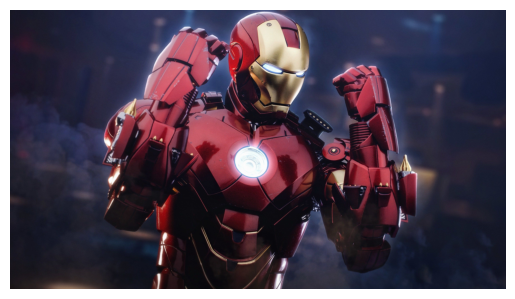

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAhwDwADASIAAhEBAxEB/8QAHgAAAgIDAQEBAQAAAAAAAAAAAAIDBAUGBwgJAQr/xABmEAABAgMEBgYHBQcCBAMCAB8DABMCBCMFEjNDAQYiMlNjBxEUc4PwCCFCk6OzwxUkUtPjCTE0QWJy8xaCRFFhkhclorJUcYEYJjWRwtIKZKHiJzbB8hlFVXSE0eEoN1ZldXax8f/EAB0BAAIDAQEBAQEAAAAAAAAAAAADAQIEBQYHCAn/xAA8EQEAAgIBAwMEAQMEAgEDAAsAAgMSEwQBBSIGIzIRFDNCUhUhMQckQ2I0QRYlU3I1UWFEcZGisReCof/aAAwDAQACEQMRAD8A+MP777Vy/wArbSVhEgMIPVHTqtNoHVHApuowsJwce4u4R+QDw8aOCliCw+8SEFpKNgrl9A9L2mNqp7Ak+XmX+Fw0LjFJVNfgdysRBBdRIK2x5zEaNDRWS7/KqNodC5ADquQJkAGtIh4OVhNUyDQOlcKUOJt1PppHescGhiOnti7tGgVJ5nbGKq7zEAEKHK24M0X6ifRVHGEodvmJKwh0jD/HTQMpnPW3TzMMaAd0LjPt83ERQbeLxUg6pIKDcbveKZ1okeJcJilQXM4xmbja3x5jriSDQEw/Y8VI0yTrxI993LTy4nSeq4NzCKOogBx2N4Rh3x4TWYkJ1lHG0Ydwmw6TLTjEHBLsQU0D9tr+zxEADCbKvjpIJVJBpeGPz5GgjPZ6obkAy/2JCMiuO3Lg/LaZAHgK0OPQJsdWkUSNIg6CUjOJ9BQiF+6+4Xwx8tIMro4wi3Ce7QIHIIBBxmxI82k5mIddGyIJI0DKYRMFxIOqOMwm7jSDDvOjjauXB7BS76cbxaL3u9tJAyIlK+OMe3TQOtogdcjg3KWWllglK4ZnwypyF0OQOuXCZScgmiQfg4ihI851+x3TiANLwqOm/TFliUwxCLHAbRow9hpIMW+YRe9azE8u9oL62+bSQB6hUfeubCMUjIzDjg4qB4kYSm2PpoJiYOJysxAAytZ2G21zEFK1oq1IHctDQS6WXoKnNqJxmDsNcXC7xAPLiD2ON00FzcSPOkzPE892nol0VTQfjwnEjTQ4w7d+pzB4iZAHdduGDTj3Kfdoa3AsR+EXLQQpi5I+8FiEQR4vMgIr7AGmh1czYxUacN4oY6eahrtRGRX44NxoSJcRhEpXyexhKQf8bTnhl8tpyEM5BWxMJIMugV90znCKgbxbhurbaw+GgHIIwtEBhNkg4fE92iXec9i4PFEVuojQUwqwjEJyy5iQhQ6bhhXLhNttrE8NCms+grtanfGKkV1O6EQ4Ai3+aUaQeipGETdTMGK+2hrQUnXpbqC8/UQgELTrG/opIGanw43SVfy07QS3AmcuO3GuGRHX94ZFuD08LDQCDe0YpvhIHVvtGHfJtiJ9NEFUkHr8IRctTOhENnYv77f5aYEOKODQZy4TCJzFMN4VxzMETNQ0HQSCcLucV36afSy3GEThMPluYaYrYQcqYpI29zNL+YiXLp7PHRc9stVAxf8AM0fuvPLQ66J4u25/s800KggnuXG7SK155aQlUf72/b8NOQQdN/5Shaa0PF7trl/MQDkZKNmVNBcJxUDlWhwOuE5hKdROMuns9IJPxlLw0DKb95akFSN0QkzBbYhaMUjxdvuuIny4KMEcHny2isKiy33VNBBOjeFUcwhIWPWLMQO7/CRBSH+6/BTpFLxEELlCMQcfMKkJSJG7T9h0VSohXYBmCIkDVyCAfFTjKHb0+27y6iCOmI6yOCDfK4h2pAYIXIx5SIKnl6tx0w7+/wAxtAqWl4odge2JJo0G2KJLmb3iMUUGgofFTFqw6HbNysouZ5y0S1K41/eUScbIiQG7GS/wkjTpHtjCxRZiBYd3QW47/Y2nadG918OqLYbRRmh9QjbdRp1Gk1OOcFf5Qi4eGhUDC7MMi07f/YNz/GnI8YkZhNj9jmJCPfxjwx8zMInxRwGFocHTTIAessvjbbV912oTy2no4ItAx0s2mhp0kejQ2Slf5g0EEHYazOHTTIFh2pG05TFxU+gunYabuEyv08tIPq2w076BC32tLcdN0g8tAOT2DCvx+267iVOIkmGBEgd3CFxeG2n0lM1WDASAebvuETkIEJIGgxkjqOu5lRAAy1IzFbJSwyd5iJ5crJKh9gmKLccGodDLkDrkEDWILDbTy74r4RcvxEImmGUzkARBIP2Ct7fd94gYtItEASt4VxvMQ6FxkRoI3Nh1rLxEDeKRku5zSuVB5fu0KJhiNsYdPCKXhqaWEYsu8JwceVl+IoRi+7PFPcg4qmdpwNbnuyIArFJAYQXI3e7TjMERKQYBx77WYkaPsOhvx5oiqYWh0cDtRvhYnM8RBgadHBpMaC/yhZiMuq5hYWXxGycTDQQWksxG6b+trzl4aBla0xyf+8SEQDro6rY6WHvjTuu3w4lXN800mgrulkW/UgRLlMKXgdc/LQk4+oo4GnKYsxBBOij9iPKEUVwnn8tEnNNj/ft5RRYg0EeHcMINxvbbaQDy9LCM37DmZiYaKObcHV7xxvMUOEN4twnzFMQrRIwi0wXyNxlKL8tC1YI0UeDsE4rmHxPlp5cQW4DYlK/xB/4/y0lYpGdJsPFd+miX7GUrxbg4+LLFvtoWO0EsxVMPxMxONkUxVDscR0biClC5ljjGK53iBlCIkAShuct2oiAOMpuC22IcHEIjtTo4HQ3I99vLQMW47JDpipO4iBlyTblPDxEI/IdrtVEunbJitZdNAxu33f78IaB9WCX+/FvoaCW+0FuPmlp8xXrRYNAtLcYRB2xixBC88MiGjFwtOwTbLmOD7xOMjszGEuw221VxB+IkluNsEjdv0sNxSqQZWiRvGHBH8Pu049Byy8btzLqO36acjxpaApQkwqpRN4eXTGkaaIyK+SDK93h+eImADLOF5bmw4nIKnA05TLmYbaOswq4jE5RWsRI6ERIAvOVaROIgHmJoBhxybLjeLw/zOGisIkAR344x7f40S+GQwgkJGTMJmEcSEL13/UMkBCjgEJptsaETOMTo4/Xfw6RS0+Z3lNWRvaRx6C1HOUTDVYZQiJA6GMkZPDp5lPLVkYpwpINIgEIEmxV2PhqtggHXaIb44N8RRiqIIXss3GEl+/3rg0hBadgxQkH7dXhp6zkBhBHc+n9NVSHTCJBoZJHARuDvO7cR1U4AlM5Bmi3PiJxiaKyUMcft0nPdqGsIdK5mNELlq2xGZ5cTpGXiR90IY/OYkGXq0s0xx80oxp8x5lyOnA7w/DbQSqSMLLkFMdPL/MVkjSyKXjCU0F8imlxeuB03etU8tQlpVtscbtwrnnhqYQvvDNSm5Hy8NCME3U7LvbGLi8shFCMQXYwlbJG7hI0iCIkZihgvjFhkKTiIGJ0mNccynUKJsUcYRBuYkGE5UGkJNU4zCqQE+Yh0IhsFMOP4fiIdCUXrb5TWI5zEAjIRFgbp1b7Xd8tBCukZIAdx2+URfyxp/W3AYphkjdqlH57tINntEDRnHHI2iUyK1YORkpGeI5HU2B4mH8NJOCMIcbRiQQDwilKptDxSQBCH/ihxiITMRL1ZeqEf43S95Uw8xXw6L4EIJob01wsR1xsmYnddmKN+5zBDIPlpCFKUsDtOPN9tvh4acfbBEYZjg5uW55GrwEDtGFXEZttx0Y8NI0EsxGERiR1fdod3w6DXG3IKXMxPEUwxGLcpX3NsRVT8iSDK7MQaJrYpZVMZOWROMToozCNxIGsxz/IiiTOISlVpU/P1Ekw8K4Ernel4iuWHTNxu04Cd554ifSIzbJQkHBUjK1h+GRBHi33qlXCLUJ3aQhg4PKuCFh0+IRATfj++X4GiVRNtj7v4fvEmXjQXx8RsiBldHA9sRjbgEQWIgZQFJGYTkdW+3h92lgEeKSm5f5gr4/8AJhp9D3VAYV8ke5SLiJOoxb9aMcAxEpDc/wAfERLlduBegG5t06jnDQBMFCWWjaCS4PFJ3nn4iBl0aLjQYyN5ovPeJyCM2zpb97y+GiYxYHZzb7rD88NC+AmBGKMOHc3BCHmVMNIOlLwaBBjxaQy4aBiC5GYpnIxl4uH5I2iY0BFfCI3ExHEJP/w8buiDLqiw+7SYVw2xfwxZjfmonGVojJWxwDb62kVikjnAnv1SRufmectAIMTUxVcHH5bqKYhjFl4AlM5SuFaL9RQkeFcdbJGP/ZTRMPO1acA9tobeJmIRMS5ZMQ2RBgjjpu95zPiKYlK4EQW4CONNcP6aQmic0DpXIOF7ZO7+IghQiFBWccLV4fxEKHlitEj6gtwD5ThPDSDK1MRhEa5HyxfLQMTX3yV0kHHUw+8TkKCareILiDy0ADEEWiMLzce4KlhoJp0CmIzdcY6tVzMRoxGWY77v96ccqYtYvxag8xBYJNU2SmjgpZuJ3bnn4aSiUcDui/APY+o4TvEYo4wsjvk23cvE/wAimGM0rfaCQcfEGWm3mKYAg5UwiQBFoIT26VRxOMTQ4wiDfjJlcQnL92ph0qJW74+FiD7xQtBlZh7cb4iuXgBlDxrjZRwU6bg+GgheyEjxII3b+FiU8NOQTUxBpLOEpiv1RX3MttQkEHQSPtR3Ix+78NB9desDK0OD74SntiKPLHxHG/LaR3QLQ8LQS4TYKUqclUbJWx4nd8xvzlpyCMJl2ccjI5ioSSYFpFWZgucUvvPqIGEIpd4uYK5xPEQQv3PGbgzS4jn5adpkf3WcvxkyyYblT6aAhrFJgtwEzfdoGUJbgex/1tiFfzCYiCCCIcAdDhI9woh7BE7QSkjZcp7AiefPu0ANGKNkYdt25hYfMUOjDq7lOrh+cxPMTQZosEmIxI4OHifppBlCUbJQjI57z/J+WprrCzLlCW+Gabv74m/mLJS5WhslKODDaELDIsVLidJA6G/7HdqzLkN10nCexhNkbc/MT4EWVthsuaqY1+Dfq1HFsNhzZs24OMeEInDItMs+apx/9lItQhFsNnzzVwItjmOuf5E+tgsbzZc1UgCUMEcZCkqkWes6aCIdU19wWFy1o1n2pTZZJBAP/ifD/TWySdqmbjDoDlVfqOJ9bmzbhLvFgeLcv75SVG1clyhceFXjyiFKMnnMWt2fbIezwG0BJU2G+IsqO1DNwO3Bk3GyiGTw/wBROYpzZInZJW4H2+GXD7xYe1BOjg3yQD2xDLhjJw/lqyS1HdEYBGH4RagyLG2pPhLhORwEFhFElqQYe0CtXzCNHBATicNuo2sJaAt8wjeGPEWVtArUu8IIxt+HxMNa3rDNBK8aU0uVfE5jirY6EGBtAoRE6qd/NdxBrD2gV3R96CMkFRopdjxHFftR4o+xlNfccgplcp92sDMGdJG7cJGT4ayzdKtTnCtDqmYgJhC5fEG4q0wUJqwgkjq0m8sauDE6SCcFUxIGvqKgQQQzHUIMBOKMQrg3OG54ixzaoE0VSUjON4pCeJTQ0HKv36cbpcRzzUQ6FyMwnL9PEqOEp5iB9Yr5igGOPfaIKniKk5mZphmCUjIgk5rfEpjSEeDLwNbFKk1iU04ym2zCcjg3BFKLyNEm8UbwguQEL8TmKDAObdHHOFDASNqq7+micEYtAQdtq4URMP8ATRW23TDHGTbcGoZjEjC8QfttCETEzFNdgwTVnI+q5HBTjKUvEbxEYVwxQxjjIWqQVQaQj23oKHYJlCLl4lNOQYRDeKGCCDcE5+YoGCEZWcVsbgiQFIMVNvl8xDX3iMwnB+26ggncK/cHw0EpXDTR3Ko2mhVPdphcwMrdx1u5xEOujj/A7f5jfkiCCMK/uE9spPpt+7TlEZyMIg/1iL+XxEDAEFuGFsewUY8Qahl9Ji3zFDscWph5jjimlym7P+65ATKLTp+floIyEkHZTOcoZeYljBC27L9jldvDqOjgSDpEgCUJCQDKPz7wicjIh0jDucMuXzPiJOvSK5oKHbpxlLuVPOWqw1DMO1I3gjjbzR08z3iCC0SulkuXmkLh/polwmcqmgJA6SkTiVED0NExsTNEKn7z4asMxJvdVUI749hseXUqcxAxOjjnBOXBlqiL8NAyhFRK5ijdy8tBBbjpr9VsosTw+7QYCMuQO7DmWLT4bY/doIV0kdHYIXC4iBlDLS8YdscDV9yn7saBlauGlTN4fn3aAByrt8zI44yORlw6iTLqtx0s3vE/7xsvbedy0aXikgOJwmJVKXMy0syAapvMjHHvib+n7xIQT0xGYUnARvbbyx5fhpx0/wCF0QcoYheeYgn3rSyKnB7v5iBmhG85BWGODcqU6ZEDEHbNvueaimGIIr+gQW4OGIV9ymkrFKyxsOkjLmNoGZBl32rlweWUWGRBBN6KrlwmVieW0YuisYkcfCabJ+ogc1pLpga/sF7CGfM9YsvgjJ7YhD+mPxE5Or+Dmm/xlFv4n+REwXSUkHqJ3ruIka+8PyoY4IxixS8tBh5YRu0QBLpbgHTaLh+aimadmGSmgjbKTmVES4nRwNBJfdJSEVtxOMRhTEBigjub7bXmmmA4y6RD9skdSAruwggglJHpxIB7fh1Bt8tA/baM443hcTiKYYqcDQbkBNsruI3xEFzQtBbj0icggHttFzOXxG6am0Sukp8a+5mcSniI7L94eLfjgHw9gam6nRwGqRwDLhlLc/xqa6wRqpRDtjLccdbSDE6OM3Y3KtLDgJ8NXBsm0wBE4Slm7HmogcqEQ2RB2yZReHxPmK+AQtBKJkRoCQE2ClwyKYgmiwNBjqbbm4NvhqaXlQzWK4QO5+ophyocYV/uncQjdRGAVpcW41fHGPY+HTRopURb9Sq6Om2rPZWpiB2T2CbBXP1PDU0zK1IHTNwNcKmQbaArS5QdcZuIK/UxKaeAP3h6V03MSOlsEJhqYcqbs9UJKjbRBFqczz/jRJypi6aQYCR8LcHh4amFZaEYg9UFa5By6jdNTSQjXPvQSUy1S4mXiNqaXss2iYgdMMlXE/M5iudlC28K/fHmu3Kn08xPwCGXEYtzLgabcazG+JlkUzTpI3akDtyrhqaXkDFJVMO+Rsgmu84ayUlZYRXDFNfgI3/Q242NMwU2MbLypm45MphjgpwF88NTScq6N7iFytslRsaytn2NpcgaC43i8QZPEVmXsV0cBtu5uONN0/qYaYLJsVL2WHtEZsSMeLxFZ02VUjapxtX3Sl+ZmLPS9hO3GtDcYyjxMzmK5L2C7LQOggwstCGBl7L0zWEEmY7Sp/EVkdjGKOALxB1b9Lh/lrYZexmhMl0xjcpu5ZFMOweq/JytSNojrgmyeGRCdbXpexu1XAik9jKKVWZexacYalxqkLmLZ/sFokDRoBx9VxrM8P4dT8tWR2WEQ4HdMccYy3BCKIhPD8/UUZ1Vrtb+xpwRIHXBwOjabxBkGpgWWEVxoMcEe/V4ba2GXsd0cHZZKM8dSqPbqcP3aytn6h6yWoSCTsuwZqOPKGSVqe7S52VJw6NMHYxpWYjNouXCbeL58tqyPVwIx5lzc7xdgsz0UOmy2Rwdl1VmhuN0yCqYdTxFuFjfs+un62ZdkuqsfDb4ZG0ifLqr/cyFFrzZL2CAV92TYcbjaGW42ROOynZZkptglMTeG4vWMn+y/wDSELLwdqsEgIBipUsxZUf7LDpgFcNalmR4o4y0vzEv76n+a/2trxzosZocFEkHLEL5fD94oR6udlHA8H6n6mGvaU5+y/6SBXDSsnNkjzaVTzhrCE/Zu9MA5iMM1Y80SDitX3CVEz77jD7W15LJYxhXNIQ5uEXw047G0Cl4zCNcjaI6MXE8/LXqi0P2dnSeIb8rZE2DEaG1fG38tYe1PQP6VJWXjMax5uCPcwsRH3dI+1s/g83ksYJZdkoBjjdzRXxk8QahmNXDaBslDf4pfqctd4tj0UOkiyyQGFY83HHmuCIsDaHo+6+SsvAEtjngjHi4kBG/EV4X1WDRb/BxwljNEq6b7nEbb/MVCYsZ0kfrGRvCK02NdUtDoq1qlSRhFZpCR7+FU801gbQ1NtiVvu2DGMzVzCvjJiZeYmZ0qYWtDmLG0lxb9MVVwRPJFQnbGCK+ycZG8xrD84i3mYsYxSxhKG/ATb7vmLGzljBF6tsndYhO8S5zq6o1tDtCQCXS9K6CE73z3ahnJAJR59PbKP6nn6i3CbsvqLGbscF8mZhjy8tY2dsY1yMpdGxvlaw0icGiDUmjSxIzFcJGPbwqjlNWe1Gbjd0YmwUm+TDVycsac25MulyAZaQqgyd5U8RQkss4iRmKBvDj4Y+7WKyttrsIO2Wr7QSXybbmIrI7ZdJGZmPmlzG/P01ipiVd0wG4mXhjxES5WiRutjq0i4iyWUNdc7a2yDt4IpdkRiEgGXC4nMH3Y1Zk9Y2ZZkRoyQVMKmtVGXstaaPcpYjvn6iQk1UrBISMbdMtOny1lnQ1QvbaPWgOjSyIxBuYonbmYic1oaolbv7gmstaeO1N8xQDJG6TFFzMTvFD282wZ4mLVGPicNL+3TvbJOa0G6up6COAYszzh01jbQtkzhvVt03R8wf1Fh5iaMUkZiuUxExe8VOYmmhwGqfgxaZHCJ8KC53slMWpoKSPSWpG1Sq0/DIsVMT4S6Y2tzNKPvFDOTRikZ0TkFxq/wAttViFOYcbRm4yZhW43O8T4QZbLD9vMW+EQSX+Lw8TEIq04ZomWODfqFw6eZ8NQkZcga2481sXzE4/4h6aqQDqd3zBrRgz2WIYymbgCWnARuBtQtG0EgOW/c4gxZaeXEHbAUrcHDzKnDSCFoKSAJQjgjGIebf5eYjBScyELUeZ95sZahaMKCAzMEEDV8TWXmKbFuOmcj5haZFCSkONow7hCkgbEXiIImSXC1LwOhcgaxB5aSYF1y8Bxe7+YpiCNNE/dhiuUxU+7+YgZZPbDoC5iUiZeIhRWmBO3zCpwO3O8TsuXzTQYPx06g0DokgCU0ZG+FiOJGpMswyUJII+6vjQDuhEPGuQDFcq1B+IggacARX7/F4g0RlMW+Em/ufT+mnIKlBOMjv7jpKZPEQvmha7LcaMO/yszD/LQRkWiB0N+rS9WJmILSuNHJfdxSZaBmCK+6HiYuG3xEKHmBNS7xm4HBEwssihGJ2YjMJscA9hspafnEQ6YQ+G3lk2CIKIwRxnKaMlWqLmefmIAa4oW3C+XPeD94gjpb5ih8UeWnIyIbGI5il+I4oZylLwBZHcazPiOIMzIMruj1ORx77pcNPoqzEFEhOL7Dg0DmnRx0dhqlVRiDeLTcb+ZhjRACXpXN+mK+V3EcSEK0PthTR83l4nzEEE1RKAlwmaXbJT5iBvTRIDFCMfN7wiAcggl01Zy5G7lCTjlWrgSgvx043SCbbHmIIKmyI2IXKxMvDQMTRYwipwO32i93xEYInMDLTZEElMtziD8kcQ60NkQe9IXYUztWM3Yx80pMNQkFp7RH2U0Fzfa5fhowUIPQ6Sqa/VuZcDfiJ5cTVYpoLlSDCw2042RX9Gn/59tIQpijgMI1/D5ZPERgA19zgDKhxCk7waJmaqRmeud22gkqEtw5TEjw8LiIH1GyB3OIiAEwUIiRuuEj3OINTDFSjCW/H7BeWTM7zvOYoZkTROoVy/TqFLTJljTy5WpeltwVIHUA4xOzFLTtjcqC+YNJMaZwVxoOxviJiU0hDGKODMcbpDpqYgjCnI9BTDg9jmETDCNb4RX7/FLmJGfvEDRtvcxfhqZowrhi6YIIGstJhEZe2CbdLmIRM5BdQ3imgp4vEQ0YsxG0bYdqiFTIka07DrkEBOLsJ4JoxRxtBGSB3+wfvO8QoGmr7QdviDy+87xBaRI8OP2yu7FNBCu0BBueFiJGjFFSDBTwmqnvEwAbxZiA+xHA1wvOYh2ccgaqVcUn1EEZdjMKpBviFlp2jdUbQT1Pd01XWvAS5Qhl4AiDh7dL5iQfWW+7Ox03GicNOR4t8L2ViC4g/I0hBNRvFMSBvbE78RXn/hJ/4UkZimHfw2lM0Eo6W46OBpqoRQjKYVYQcMtzh+In/AFj3ouGRxJsAJpMW+8a5ANvCw/wBNIMtTqEHxR1HPDRpw+vbHA7wvh/EIpnQufdZPbHsctUCEbxbgS5heEpiF7URks54W44oSCCUbItP9ZSjqOZimcCIcARPkgGK/V2HP00ImmGLQIbOgxPwOjw20OmwSh4dXfRLiyC8x0Ysunh/EQ6HSTsZbhIx8XYcJmd4hQDE0SkYZPYbJ8QiB+2bquNlJT5mWkd0CGyI1+MmUNJR64AFbJATCKr7DDiE7JwVtsf8AsGkGKnAYRhkj4vMcT9qdHGEu5TgENO67y3MJr5iisvAhKQ4AiAP8BSiSEFuBEaD6aJgoRX2acDvh/wCNPBSjjMUIyexxKasAQLpHZrbg4rWW3mJJhkQ42rkEbV9t3mZamGLihv4bXnMQ66N4TdwmU1l8RLMA9Dt8O5GRx0veJB9jFcD2yMkfN2HPNRAxZ7MBIM0WYiYq3KMFTK3CEcQAMoS3Aiv3N8rmG2n7K0OAIjOQEyiUyJ62MzHHH4nhpGnbhn80kYnfmK9gPWFc7Vfv5peYk/HpKbxWr9NO6EI46zkBMtpJMFN2iCi3A7Vy8zEVACCNthEHDFcL+WROPEjCZyDvS1G0DE1fMVz8Hh5aBlCUb+jQ3A1cp5Y0wEGIJZlnbucUpamXUQQ3XcN1EJA7faFiEJ9NO8btFELbmEVq/hpBiqQOmHT/AFG20AE0GEOANQkbtJ1OQQSleEa/HTjwkS5WfU8TFvoa+79e3BHvu1MTMIRAOQRhD/fcb2GhZiCaWhvds2x4ruJ3ahFVl4wl0d0PDcUzVODqDBB7dMXvEBDJiCKXj0lpwZrf5amGIxb7phkg7KTEF4fiIGV0kYGYPwfgGoYGS3AzV+OMeXieGmBMRkQ4DGbJ3icZXbhihgvjF3iQRWrhqFynU5nMbxEE0fd4AlNfgHsOfTJ7tAOV4Q8EhMSMQqaQpXiUmyObbmXTU0wVqY9Rm2xUmstQtG7HAYsntjczWyNoAdMW+YRm4KlLu0EEYpKpo7lTDQXQ1cy4yNwNcviN8ttAxdqvtAuQNDjK3l8T5aC0LT0vGanHBxB4fE93TTjEHSOMxQxkczCfLRMFduBLObBC4uW2nEJ0keW238tAQtBLMPC0ucVsWY3w1M01i79SBtq4nrFH1zVwkDVxoWIMf+RJRFc04cHD8+aibD3AJeqR4uYX3ahGyKYg0iNfw6TSmHS0vd3iNuD4iGmhxuXIIyN0hfMGNGHQB0Dkbu5Up8RQ4o4PVfxIG2sTvFMQQRafXcJBv8shOGgYnb+gux3tRwiJzBBmaJ7dwfNTiFoERkumCOOpHTLTqfLRRCOAwpyC/v8AeIJNTjdIP9DTSgH0iCKYjOFuDlFqe7SaaRIHb9zm4dTEQ1UgoEJiUk/XoEOMzO2RyP8AAgsgydml4HS4beFUU0v1ypIGjZWYVz3Y1CQQXGRBbj3xOiJiZiBlpx8wuGQThMOogHIX1ZmEMbbTY3OGkIU01hGbgGW4UY8PD94phlqUnOaUXEGh2cLcdMP8YifUQWhmMSqEdzcEX6fw08wJrFuXxiHG5Tg8TmIEYJSR9r0QEjH5w0Dq6PYHG0PiYaDCE9ZIzCbHSHiKYZXY4HafK4beWqxBfd4Aj0jjgI3hCqfDw05MRl4lTC+n9OmpgEw3uzvTTY+K6WmTMcSNaRURVMSAv5nLTum0DpAjv1MqoMaQlG+02Or4mHhoz6ADK1cD1DJA7VFw0NOX3QkzP6PI05CujjCJskDuIQuGoSlqQZdXCG42RH5BmQYtOmiMJBwKb74L+iliiy04xTjmM3G1iFqfLxEkyVwcDRhjgdwy5fD88xXBCBN1wNGvxjwnRUyeeWkl9DomWIL7VxspSOD5idposDV/8bm+iXK0OM2mT4kaAGu1TDJTDqZv00gy5IjX+V3eINWSCMIkc4IIxxuuCHuZmJUUJHuqOsMkea6JsjiJggymEOCTKa+2UeHmcvu6iCCdFH6rnti5feIdCUcFFuN0cBXfzE+LcMLfG5TEKp8NLCEZXb5mYCRu0h8NTDKaaHGAoYKnFFid354aR0wp2AInIKXh1E45anAGaDHhVSFzOGlgFecg0lNHc3BfMUMc2YtEpr8BG46ZcMadpqYxth1touYPhpxi67nZQwRxkLVKXzxEGQQ9XUOkYd90cf4OWndMKiUObmeeYiXL1DgZDAOMlPluJGjlG8W/HAPFd7zDQE1ZuADI4IGqrtMfefqIdNtheJG45xOGghTFmIGjXI9xrh00g5XfC9HfzauWgQORhtkIb7e22P6ieWEYV8M05fpx+GoaxRxvBJf38XE7xTEKFz8bZRuiELDI2Tz4anWDkqieLsQEbpFqNk8/LQQhhDeE3fGLCKJzziJO1U45ztjkGaMuYphlCL1PRxx1HeXmVPOYp1gTMq7pg/B5+IiCkSBo7ke43y8Nvzw0ELUZFpGOlfwsQfnLTjmglHgwZlN34nMVhBD1PeoUm3wstvxFM67LxhKJuBq+VouGggmqz3wqmXUUMzVJG1/YIZdj3aDExC6QkgMILbmaQuIgZTOQGldAxtlzCjbqeIhoIdPqM3Hvl4bn5iR12t2Ml+pibYyfTVZowJhVtgkGGUZS36iP4rCNh4pMMg0gytCjNtjjyiD2E4y6RDY0Gj+oRRP/AAkNdRI2nO9Lh5iBlCLRA0YcEbt/CvpIxB03zMkvtcVwYx/UTkK1c9juy93hqmsAZWiRhqZcDuG53ZEkwJqiYw7m40Mo23EEFUgk5sw4HNt1OQxikjCWS4kFTYpqliMwTT2W40EdQVx0oiNpHTFl+HA6Op8tBHiXAlM3BLivtFSURDe0BgHHTdIQVPzhq8IKEIKnStKOOAhfEIkGU2w1fgjp0naZPEUwymE86Hb3HcsY0V3I2g34OK6rDMdTpMG+3xeHxPPEUJCGbZeJHSzcxBBG2wiy+FsE+Ikxb4XtsnD/ADEDMkwL7vHR2ycrMRGXIFmFJi92hoxCQBmgx32sUuJzCJJgrI4MS418RAzHg3IGsrDc5hEgxGESCjc5ZdtttBKtEpiQR1MpBBaSkgCW/BSJAJoqBMO03hG2MoWYgZRCuVnIKbQh0205BO36JMW+5uKF1kcDQW8OMVKn4iCw6dx4RtgjdIpaiQgghuNBbgHsNFxPPnLR1mKNkvMj/GMnid4iY0mKSM2iniUhYaDIDFGyE0H/AMpBJsIiQMhGOPi5ZO7+IggQ6BsskgjHlYjniJCFCUlUNzhcvloGBJelfC8O4RzKy+8TjKAQ4Hfip2gz5I3QjHHUgazMTMSDK7RZcj/7PD94q2AhCh2HTRkgaJB+YNBBBKSM2gw8yr9RAytEjCW5BG1VLvjpodMIcdHYp01UAYnawmyQD+GjtTPrEa5Bv+IghWphktyBzYE7h+INAxNCj0iCO5xSZmYgD3cEZM0hfqZiHRGvmecjzcxBBMkgdMO+QVwXnw8RDW+ETlzvanLcUWADZagCYOxvlbEggpzSOOcKYne5ficNIQtNmb4WFxKmWnozVEpoCQExW1GsEaEIcZpUMF+nVdcbzEg+xt9TI7m+3v8AiKZ12+05BGRvvB1MxQkeCSqYkEFTmEcU1rwTEL2qjp3yFvuC+W2oRlCIb2Jh1OJyyIdDm37m/lpxl9UbIB4txwtNsalIaMKZZEEhG243OINI60SkZyPi4g+8InlymEPMv8ITnnLGkwSMlMMkHFGJtCPyB0zUAS7lRovDSMu38uMfKbc7safCH6rn46uG5hqF0xRwaSuXyFI0KmlqHmBaNt2+PDgcJt+cNIQYbkekbdzfcd+onGZokGgumM8BBEac+WkrFJGEQW4CbAiD4nMQAMro+sVy+PhCc94RA6Q4wlbzMq+kaD2eMwg7e4LmeGglIbJpyMkG/VQExPYCzfcwqtMfEIoZcR3Htj/2E5Jp0cDodjii4aBFyShuR5Xdt8ThoMJoLvh275NsTeH7xAy1I3QxxubDREEE1pq7cbt+oXiII7j9sbgILCdcJiIRMNBKOB1zCxC/LUI/+onIB8NOSjL+3cGWrVRMCOK47Tq3P8iBADK6OMLJBubDY/OIkGUwsK5A5tla4dP3ies5G0FuMnK8SmNQ6NByje6xkjdwtxExgmJ7YSm2yFpCFw0kZQiJHRJBATYaLw/zEEFudqNtjFV5Y/I0CL6+xlNc9hoRUtQEEEN8JTRxwEzRpCPCwqkZBUhp9JTimIDdk2/mJJcsmIkBymHH8yorzBJhluB25fyh+IpmqbzIyR046nlxIUzujq244MoXDqIG0UtK5fazC3yOcxUmCFxIwlDsO3GylppyaQlJG0ZuBqr3g3ES4mh9TO2TKL9T4iNI6cZhNj4RXW6iWA7o2DMkvjwsOmkmNAdF8L0dTNaHhuf5E5QujpB8XhpJj9/9G58RC+BJgrtYxh+G5hkT9b2S5/0aULRhEfFuEF7smInGIIpykGP8HDINBp5gzROxiMMkDXhuJHadUI8K5xCeGgbpSQUcPbc5fhoaC48XQMjmaXz8tBZ3T9UAS9Q4x7FLljSS5QiJGYNypsefzE5GRDeFfgcKSMXEGoZgoBS8FFyBqkTc5eGgAhake/HGTYwm0mllyMIhQDcEOp4aClNsOmw+LUy8NBHhDj9UeLVbF8xAIIrpPU5fHlj800O1GStwRtYpfEpoddmINJdFyNrFdcSEEEVYRu9QAQTOiOiOP2yky0jTuTiZQtvMTkmtIiQBEGCm5iCxEgtAQ38Puh0yEGgHadvtGjJHle8IoRlauOuc0VNO0EQ+opo6eK0W4T4iJilWFcgc5qASXqkZEG/8OmnoiJVM5AMt/C+Gh37xG6YneNJNIjC9YgkggIW460gNPERojxTEuNX2hFTutEja4WXhoJpa0Ms4fD+mgYXSQOhb4vEXn4OgBlMW417sewnab/f4rSCFdv5nFQMTI6WxGPm1EwEaMWj1E/BUTzDIiMVCcLvEDpDjd3x5pUNAJWegHwiJkACCCUkbJm6tITv00mnSYQ8ynxaachTZTd/m5iQVIjImx5fEpoB9JSiJBmct2miXxKVODmIII2bcJA1SdQMTvqLUj+GNAOTSHYDpvk5qQhTf3tt5raCCCYkYRIddwtxrMQpMZlK/Uyi1E+nEZ5uUkJ1CmI9AtiAnKRhTH4IB8XL5aEHHoavnLl8pDugWmNozcA/8iNIv5lM3APKLxEmkRhE/oyilxEA5C043XL/w0aROjgd2PqIolJVDBH3id1ob1S/TxNhXgCOuk95UQOkR4RtgnFw07Qf+K0Ev8QeWgYmr7oXOXxFIgQZabwjQQctJ6+uAzPxVMQrV8wqneCR16dgIdwnE84aDCS72MIO3uNJxvCHA7fH7bfEQ1UjaNiZhEYo/W3lweGllnjFwr9/f7tINktyi3VxU4x8LYg4okOu0S3PCQCNBKT7rvkLh7/xFcayStkjGVv8AG3zCKsN6VJgt8pTaXhVi1IycLD/yIAGVof7ttrE5aSYK0PBgqbfeJyFaJGErZINyqjFrlMOPlFQAOl+Du/d00ZkbpsPbd+ooRFCG5ifgbT4Q2Shg73EpoAGZ7TW0D7rMUzpnGRGjuVMrzy0jTWl7h8SokZqR6OJmDxEZhMMRsERtvc+IgnW3GaoSMbcHdpHXaJAxjbFi4icbwiVRDHGQVJ38tMAIUIaxbkEYxXMXLQMRijgczMwXdoGWnS24ybbSJelnX43VesAgtBbjW5y8tOIWgw3hORwEwnEUSjeZJB3haaT8ASmbjIL3akHzIGjEv7jZOGkgK7cdv3OKXiIGXQK4ERth25VcQSrR9jukBM195q5fFy0EKYQ/3x961TGkl2Sjg3IKvhqy7Tja0bA80uIhSwEY/mGODDjcKLLSD6hDgZDcq5vDRWFLxmLue7y3E4itX2t8hf7G+8QKyOhyjOQJyCdxbkbew2gelrTV2ICZRUUReoQdjhlw0xSwDKHre9siTS83G6bbJtiKnIIwv4o0cfnDQPQ0T1BIOlhkxOWp2DWBmdrFNHcJsOi20NcI0FzNLzE8uI2j1CbvkFl5iSqUdWo2W+6JXVPRKOBoRIG+HmOJHQlHBpKEZIO9RXENgtwnt1S1ED6nKV++1ca8NTAEd0CrCqRtVU8fBMEl/il4aBiaJ/QPbaRoE0TrLwuLT/TVzCFLTZFfHBuCKn00hvCqVb/eIl+oV8Ig34+Egfsd1SaQWJZ5yANOCDNKkEI2wEW5xXcRPRFcpN4mH5/MRpE6OPcHHUwthxAA6WjvPiDQ1TgMU2xuFGPiYdNOMQTEyx/mJMyDQLQTFuVMtBgH7Dof/mE5BM6Y3W44x5TqRoIiRtZmYUqHWrhsSMiZAs//ABDJQ/1lQ0HB2LhOHicxJpNwjQQQcQramdD3cGU2gIRCMWs9sDLVG1hqYYjNxmZ2NxIN4VwAjZqd0w8bRf8AbL7bjiAd0xbjRx398peH54iGmiQO0+aTDGh0IiQNOX2sLDcTtG033TX+X7tMgXMkuIWm4Et+5ml3PEQP29Ig3+aJPL+w0bDcqtJBPbBi8x0hRUxpkAcYpMRGS3O6SeotEQbkDVX3aBl3HTOQcIQqaTSWnSMSCPiiE4gJh0uJ+Oqj98vBofJ+PvOYQnvFD1NE09YcTFGTbUztOPTpbqCpCGXLQDk0ujZ9vcdy04zVOpnYJhVRuJGtwwpwl8mU6na6xxtGcgzWkANBEJ4Td8isjE1L4I6nN84iQYgzUvS0EqCHAUTWX+YgDwrgRb9ON3mILTS7IvV/v92phlPNXzCDAP2y+8UOCSDqCMnLzFMQTI4wiCS4Mo0BM0XBmjOcJIQrV8LwyR8UuGk01SRuybkea1lqYg3b9YZHNjCQYJjQYRID4fNGgZXh+vcG5Hy8TDIh0IiVWyVblUVP5iBlAK+0GC/w9ziZaARo22YRoIMN3vPpp8WsK4NzilGpneu4cpuWUWJw6aSXpaaRoB90L3aDAOadvmFvk4pfeIIKcESq5HSzS3EevqzMvD800TFK+ETn46qCwQrpIDaTDBBxSFbGREuU2xRg73mZiSYpVnrkeaKmgmh0jJdxq4IQtPEQiCZ0OgkGmpcdxeHw3EDEFyN2+SMbfiNoGUJdEEnuUsMrg/eJHTEJSNcczBC+nloNWZMWcKo3sOFzB94naAUcZhXyR8Uf6iRoIhxmEbb72/Tb+HzEFZLLxmLojjgput4aAGjFJAYQY43OHiKZ14kDrd/Kyx1FWmCmKSA3tjLVGMrZCeW1MMphDwL7lMoi4jaFazjKzfMXYgHsJyCpwUdseKQe2TE/yIHSHGErhHCkp4Y20hBHLLwaHiX+ULEp/EIrViwTGio09cg3BNt1KfEQTQ6ONpu5vuFxO7TkpDy/wNZYyeXEZkZqY29houXzFNapBslH1FNw4HKbhO8TkM1VEbbqUvy8vLSVv+F2OZlt5ZEOzhRtCM45sUhYnMTQcZWq2inhtEp1PDSDC08EVy4PziIILqHA6ZuAe3hIbdJGEQCXN90eIgHGIOUY52+IX5iJhgo42tOwPCEUpHPh+Ikdqfxg7g2+I4Sph/M92ph0iQBEEl+pGVstMneIRMS+mnmDgzSefOGpnTFuBK5BSG6UeHiU20ksI00RkRnKuIUtyonadG8LRt7lJwirYkDK0R5nKJG6LLRLlNm7jVWq3UcQ00PLHVwt8hCDQ0Y18IrhIB7BRblP6lRVAwrhtOw45i7dNJL/AMRS3PeN+RoGLQIcG5BA6OB3MbqVEE9d8wg7A8IjWWmAS4u1CjdDoG3t/g8PzxE4yhmiMi3NyoWmMaSZK6OCi58ROMuh2k2SPcbI25h4aAd1kjJdGbhCb8OmgZmiQG+KIrnhpHpwsxGYTlTbqJ2mqO5HuNCw0Imdr7w9THHxRFpqZqpGGnTbdHTb958vvFCSkTGgwsIgvpoIJ0kZqZKVUW5TQoJ0oSl4mGNrcIMneZmGiXEcQoO1GIRsuFluJxs7H482lieW0MtEjdy9gWITxEAnWYo+oRv66rif95MzvSZaeAro4wicjjGXNQN8t/2IB8MQ/eJi+CGAu+Yjne8PltoG+UjRQkggaxcup5+Igmj7wyW/BAQVLiJxvF0x9l2IKcZRFFcqf5ExJ4BGLc628LNyyctI7nF0uRkyxYfn8xDu4Hb/ABlLw+X3aclUjJQ7e4LvOX8P3ipNEBLldI9NbGGiXKYtyTLvu5tOn5cQ6YpaV++Mt/lkSS7JRslC23t1MPEbUKLJC+uAJd8exmNo69ApiCT7HcjHtttOESDqjgMJz8DRW3EhBSZa0qEkcbuIWn4aYvgCMiuBK3+AXMT9kOWXgNTp7ZauIhoJtEDpoKeK7TI3y05Bf3wQb5RkE25+WlqAhQlG6I23yqhHECmgiJH2U0cDYqoiCqE7tGWyIMd8eLVpj8NA2RaIHakfvB0yD/TQIAfsOuDg3NLgr9NDoetkWiCPmcPzTRWFojDUgj3G3cMiTCH6guYlN2ny1Www5BNRsiCS/ucslPLc+WnmKRIwsuRjxRfUSTGgwuIOlSaqOVE5KRI2m6jeEJtwjiqBJvOR+tv2KRb4/E5iRpq+GpfJsfjqctE492hkRnIM0ZRYmJicNBKU5BuUxUiiqZfw0wJtDOx64xwELhtNtpBlCIkAShGRst/ux4aR3RsGFfjjIIlJ3D5aBlCK405f5gmxjQDj7GLFpx7/ABEknSLHiYRKaBiCEkBmSXCbBSFLhjQ7JFHBpEYcDgsUfd5niIRMOmLfCLYpXKYvPkaHacBhi2CCuNb48z8tOIro4HZOO4RxobXw0gzBcgCWpHzO7qIUA/Y0zZrmHBTEn6glJAEpr8BHIxO8RA2S50eKOOlUGPvE4tIW8G5Vv8RxAI019z00+aQtNTDFOSpIA7kbVwTeZ+WkJoCUmMSOPcKPlp3TORmejqNxlGLMqYaAG5MV93TGNzYEMRcTiD+Z7tOQtOPDp7Bcv3iJgrWmjcI4K5zCIGUpRxmLTpe7qfpoCaY6m42r/wCAQqnvFCQzXqqEjILCdp5icZDdogCWTGOrccdb4nu0hNE5NTHY3hxwEESNsZcPvEDADeEON023Tjad+G2gZXY6QSQQVIHB4bfMSDKEpMGOCMmwVotMniJJylcMw24K43lqYA4xGDf6zORk2CjaG2NOQrVGoPDqb/8Aky0jTcxA6bYaHGX8wnxElAWThtutCy+792rgDK1LxhFojp7GXT5fvPppyMdo/fsVMrM8/MSSYTNsluR0qRNxsnniIoytErhICNtNuectAgm9Ww6bbdq+2RtI6bYk+2XICbCBkdI9sXKcbpG223MOmkIJ3TVC5GPbKUSBghmCtEgCI0eERook8AqcB/bav0ypxyrWiDTuRu4XEp+fI0g5UM0ONpu+QtKrTccc+WmQGZ9NUdJslK+1+orJCukeK2SN3y4kaCUkDQSVG4KbY/dq4MQZUdVskY8Xlt5aYRZYJcrRIHZyDvS7biyUmUwpiAMrv1IPwDVaz9IeqMJQuRkcq8QayUv1lJA0Yg+EMX5fu0+utgsZiz8Rkxh+JU92s9J9Rb9bbIK+41cc/Uw1gbPKbtEAWbgXb4hNX/P5azcmJq4YukY4CZnnzUW6EHNmzEvPGESPQUNyOpA07h5fnLVwc1oFWLtxtX2nVTanJWXgMW5B7BaWIT/IgYgiHG6EcDZeK5mK7FNkhzU45BOSoYI4OV3jmGqc5NBbjnBOE4Qnan+RQkKEpIHTEy/Lap2hajWmMwjYfCccGRUnAV1ktC1JMQ8aMjgr5fhtrW5yadJgjuDyi8RWbQmmSRn0hISBokFJzh1KawNpzTsv1CM5hwO0+Y4kWOjRWpzheE4ODiYlPLWKnChDVEHNvlaqE8ThjVwhDab+ISPiExG21QmBGEXsb0BI2sQn1Flm3VkIUM0RkrcDe2KlU4iQoglrCcJBxOZ5bTklQuQG27hHIHCVEUSzsH3OC4TCWObVAhBNZOwTNqOd4kGIIiQGEElTYdp+888RBCu3O1GJfHtiaqU0EEYtwpdEH4yl/L92qTaCElTluBlTXI6kHdtoGLstwwgkuEbpCxCeInIxsGKYY4ybBRVPPDTuzhZaM23/AO3UHmYaprCGYKUoo6LnL4nltI60SDEuNX2x1PPETjKYtEOklQtwVJwnDcQQQRTEBnh3CbAh8NtVMgHXRwdqPfq5QkjwREjauXyFw+Jy/lp2Q4xd+nhZfkiJj2Kw8uOl7z8tWrCEhQ7YRbHMzB8Sopmnb4S93SFicvvEhCtX/vhLm+0MVxPMFpx+tvijdqOExOYr59BghIJ0kASuXx4ohYg+WgZTdUYWSEg+J7tOQT2l5hzlcQnDQMphDgdqQb9MQ+J/kSgB1RxmLtxkLlVHEgyilR4MBI3bjRaeGnJSuBeHHBU4cGYoXacbt8cGV8TiYaANJQ9opTmwPbqlvk92nIZ0kAdHCH55ahJixhpjq0nPiDcU0wXSUkBXiE9hsqBghKJ0cYSlgI3mFqDH54id12iyQcfFdH7txEBTdogdDB+ARRbA26eYghd8zN/wqfMqe7QziX004NI9uAmwXMGTieeWkaBpvmEaO5uVMPD+mgYTFk48P3tRziIGyK5kRkLfc5f00wQAxGbgCXTGT23Rlw/NNDVSNozjmVU88RAymLfd3OVse8+GjQLsonmdinBSxOIgwhKsxAErl8jmKX3ifspijjdnOHALLcbU0xRLSv3O9cIkIIwrhtiONodMWGMiWZgSuKXjav0y4oiodaJ1CNfg5fzEEEEWiMJQuRkLV8RtJpFpLpZLuD2HcupTb+Gp1jBMMoRaY3TDJ7eESmRQ6ertEZhXPwFdw07bQ4HW4IOVxOIndCOXjMGnATFdFURrLmhH1uRmlake4V0XnDHTTtG7PGZkkEe4VrDSDLp/rJBxS4ndjT6Cg7M+yS/zczlk92rqV1kI+UcAWb8Y8X8tXJfS6OlJxxxu0icPy4oaxBwGeISAm2J0tNvhqaY0h7PjXIKkbbQ/IyVBoRMgzdWFTjHti4mIpmtyiMnMHtt94gjO2GoP2HPmeGprPE6OAJalXNw0GHdk5UkDwYBxtVWsvl/UTkZFppGJUbq7lNtGjtgq1QbZb7rXxFNLldrPXKt9rh92m1wLBBBLLxuhJBGPm4dROTQ7LwBEGC+PYdGVzz3icgpMVEWn+iqJTNO0S04yCyu7IT8tOrrCGXE6SP7nHc3OGRvlq4OVMUsGHTFfdazOIiXEbtEBmdsjjrgqY1NLiNsOmg4ZRtYY+74alTPohl5UwiRtVIB7YnMziDVkcq7Mdei/fG5Va+Y33icbzlYIxx4jQytk8NWZOQN2eNoIzt4tK5iZlRE11aYkHr4SmJG4W5zHKbaJeUavu7ndONk5bniK4OVavhK5i3GiYmZhqbsrpI3b9zfE2VypzEvBTPorS0gEoo2pOC46SApNynwxpJeVMaiJyOrf7xtZIdlmLfDt+GWnxPmKzLWMZuBrRcgpkEUlQnE4fLT8C9jFS9lmFReHBHvlGNXJeyzFuBFsQcUvnhrKydlmFMPCbv5RC1PhrJSVjVI3KDjcbpROKcB+RipOy9OxJi39wTtRZKTsY3WyW+TEjKQWxTbxPmfLWVkNXAuPFC3GRw9UWHy/eLMS9lhEOAxakdNoWZ4jaBrYeTsEM1fdBlX2sPDyyLJWXYxhUShHHATlVCe8Wes+zDTd8MpJkjj5Yr66X0X+i10wdI1qS0nqvqHNxuFHVKKm3h/mJU76q/nMyFbksnYwpAjwg7BM0YuZ8OorknYzs5GUUmM8AxUhfUXvPo4/YpdLNvDlpzWi2RyMBNtv8xesOhf9kx6PnR1LQadZ7HHaUzzduouVf3ni1nw4ltj49WH0c64W9MQSdjatzc1G1fpCI24TljXe+jf9mJ6RWvkvBaQdW2IJjbEQjkBB8v3fy19edT/Rk6FOj7/5A6lSI4x5hBDW6DmrBsUcAZUIAQctc2/v9tn4+jXXwf5vl30V/sR+kGfmIA672mMctTyl2bV/9iP0VStz7UtgkfFa2HF6o6QPSb6N+j4cf2pbA748oZai4Vrp+0x1bFMRyeq9jkPGNZd/dL/NfXVBs+of7MD0b9SJaAMdjwTEfEKKot8sf0S/R81bJBOyupMpfHtidENeXZz9odr5asxGaVEOCD5ams/09beKN21HL7V8SNHLs+dh8K/+j2NL6mdGNlkgCGx5SnyhqYdqanyH8LJggjHyl5Rs/wBL+TtkdKcyhx1S4nlxXP8Ax97WN0U5tpM+Jb+82uujN6fmNfNWx6cGD3Q1TnOkaxxYoQR+EvMEx0yGKP8AjI7+46PD4apzHS/OFxTRkj5RVevi1rw4tr05/wCKtji9Qggp92oZjpQ1bLiyYCVauGvMJOlU2m+0YhPbE0o//FDQLBnCXx5TraZpqMhxLXp8nSDYJcWTlI/CGoSa8anl/irHlCQd0NeY4OlUwqOgw/meaam/8VakDRiYuJvohCtH2Nr0bMl6JbU0dU/qrIxxkxXBLGzmofQDbI4+1aqyJPbcEIa4bL9KoZqgKcuQb6hmNcrSbesu0ifmE5ivXX/3Unxba3S7Y9Ef0b9Y5iMwrHgA5whZa0bWz9mx0M2/Mdssu0hjjauVBYixsl03WlZZIJO2dEZKuKPS2thsbpuBNXDabSJU20+G2HwmXh9P0cT1w/ZYWkIkc5Y2mUmoMprYI34a5Frx+zO1wsa/2rUlyDc+7OL3JJ9L7VbtmwMV/FWYl+l/QUf3owyQJ9d9tZn29T5O66ehvaMhMGBNWOcEZC5giZfy1oFqejJrJKzkYRAJTcj4dTh8yovtDO2zqHrRcDbNgyh+K4IfDWma6ej70D6+SdKxxysfFEnw5X8yPsapvi3rB0Qa1WWSPtVjkuDzR1CLUpvVcwpiMJZMg4990gvmL6468fs+5O1JeM2qdvQEj3BDIJcN6SPQZ181cvzlqakvwDxSic8Smmbqh9jZD4PndaFg5JakDpIxO4g221jZmy3b4WYII9yoLLXqjXj0X7HLMMsxyMYxXBCIIg6jnEXNNbPRu1qsYb1lmGeAeYJsmZT+GRLnZVYJ121/Nx+YlDCxQkjjGLCIqc4JoTxQwX3blMTg3O8W4W5qHb1lljDaljngj4hPd0+XiLFTllGESMLObhkK4RtUwLza3OyrUvHoKbbzR743BqmQRpUcFaAkFTFpk4ficRbCSy9LkYRNwR74nctYqcs8wsKpB8QfltGCk7GHKXnQEg5fnvFDOCdj6jOXHSUhYY+IslMSpyjgMUPxanmmQirElTFuNtjgawii+p7tXrrLssY2YEbs8GkpvdctIQTtyu5A1cp7DlTMVyYEEo2ShuRjy+G3lpGmZcOgoW6WVmcxM1k2WK2mVMWjpcvkFSEISQggll/UYkEYy0msPLpq4QTRIGqlIdLEptpCCMEbOxA5i0uWr6y5zUCCaHHp0acNuPiEIkmBGMNkrZIx8pwlQeYslAPSUjxQ7fLFxMtIQO+EoYCN7FPbRrGbGzogFl46OGIbTWwMdTMSDecqhgjjqNN5jivzAg9dWn3uJTSEE0T71mcUTapZWpmpzAqkbum/GRxqlcSEE6SAxacHKw21ZadJGzouRy5cQWwTw0jTWiMJdO20OPmKgViCamMu/UaGiiWiYIyN7bhS1FNMyphEg6zQEpX6om6fEUIxGKN4um/GTCEJuo4gwElTFuSbVEblPl8wiCCa++PDJHlDp8T4amGJqCPsoCRxjzWm+JiIIU5ZeBo0d/cwvpoLQsu6I+1B2Ghu/wCRQkKF2MxQtwS+xyxkqZadpojJb5I3SRlw6acgvXAHYggJlefNNAJ1mFim8Lcp8RJGXcCUO21ccxCII8Iftkg3HRlQSVMW+7tx/D8RAVnTmuBKYf5fDTtGKOAwgEHGPF/x+7R3VSDhNZaJzQEVwwtNyMexS4bmHzELwBC7jQfD/MUI+2aJeA4nIIB4RScNTTgtIpekEeESBsqQYuFfZHxUJOMuTuQfDc7v3aJjQEV8wrg+EPmVEkuUzcfap3NJGVOQv3dl4ZIHR0icTu0AEKYRI8OntuFxCcxEuV2/h3x7ZWkTJmpdktOPhF4feIEKlG0ZtzhCQiaYjOabY4uJTcSOOjgCUOxuU9sfDTuhLMRmKaAcFSqISSTK7fD70ZfzEKHIJqCALNyr58NBBBby44+EVyDzxEhBNTEGkRm6VJ3Y8RO0EuEG5HuCIXbpoCEZdOkkdYl9253iGgt0v76lRuopmvvEZhGjub/EGRQzBQtsl3GqpUADEFyOiMkBBd2h7+e3cIK40Lw3E8u8KiXYgJscxAym2zcNyBwWZU+JmIByCM28IG3vujqU0DpDgDwyjdJlj4fnlomBG0y8YS6R36nn4aJcTRHihJHBUpFTDA0YJHqlTNdxG8tIOVD1MlM3ATK+optHWWcgM8MjYr9TDbSOmKSoBuB0cZRCK3TQCDE6SAJdiMhareG35po0CNov1r8fDJ5+GglKWg0l2I6lVA/bBNNjpEjdKJCIHIU7sbobjhcIom/iImHm8wjm3T2EkYqjJQuUrjpSo0iMLECMjjcZeINWrSKzdLfav4SeWpXAvEHGRykKoNIN4RI9y/v92T6g0/ZmhwaadweaTzzFZEA1o2KwxwcNq+RtIMrUwxpCO+MuJ4eI4nIUIpdpkd/vfPDw0DEFuB3MLhfpoSCldvmEbY32iYneKaYKYxINBWyUsWnUIgYjdVI39AieJmIaCKgHfayy1PeJViIB2cDcAUOwSpTxHEaS6BaIBCDtu3HKdTvEgyO3DMuNuNd5w/mJyUpeM5WyRu4ouH5cVEgpQt9jFcggIK5VSDK1pgNoDw6WZU4aB0dEeGNvYaHtoELSIkdHbyiiQFmYMZuB7Rsb7SQc0zMPCCONvNGXiDy0kuL7vgx39wo+WppcQREgaNHxClJh00FiZmjdXqNHfzRjbqDzKahJRJSC58PxEE/fGbbO2266Kn5w08uJ0cAXh399wXdoXgQYjCHGEW5wsMbnkafCmI/xy+E0LljTtVIBF96Ph+SESaBGEONoJI/bL7Hw8xCSDE6TGGNvbb3BjzFMOiRoQI4KpKvMUOgQQjZEYdypA5ueGna0CmIHb/4KeIQnDTCwQRhaHiuXM0TpPeJxCMX+d+Mmw66gn3kkAad8nCLfH+ognrIyY221cpFw26iF4Agmv3BGSMnKzPPy07QREpCHcdHHV4iT1zRKW25lU8RDUnsBlTDg5nxKiEhpqYg5lTifDTkDUgDsDgaHB7tIR4VwNS5xcxBC6dGd/XVQDkZLpgCLc4rWIgZQi0vFN/RSxCDSEa6owlDfgJsCLw6lROMRhXAlcpuRtk+YgAj2m4an7rDSdqqPM7fLxHHOGgdUkbWkcEDV8pHSJyFdG8UOIXEG37saAcehq+Et8lLDFiEG3/kSTAgirabkEBNsoyixKiegIcDprlImaSMeJhpJgugpIDbY4xlvi9vxEAEG0OMxuLhkbR6w32nBuCpOFQSrcdDcg3HWnE+grQ48TLjEXfb7xCJgk0bs7PdulGL5aJcRhVtBo44x+J8Tu0DK1fM8QcGU3h+aiQlUceHcaq1W/hoGZxlCMb2gJB8UhRDQQugRI8Qke4UX0yZeGgYjbDQYyfEJ3jndoGUwiYMF/h/TTEhowhvFC5GMtIaByoRffH28N0o6fMQSqWBoOwP/AGOd42puvYg0M34CYQ8MhP1FXYAMRm8ypzcsaQk0bs9I0ZA8UmI2kILcd33SUsTxCImC6exwO3Btl8TziKwHZXSQG3IxuO94P5aCaTCuO04M0gi33MtACsjZZb5RC3O7qZaCCZv6BOR8vEpjGhEw11kxsPbqNk85aGguQOmGOMZSOlI38RDJpUlKm4K4Xu/JED002ZUzje2VotQiFATD63oHh/LQUpm2cOPhj2Kf1PETjpDqmgjgGK5V7v8AyJB4cYShIOBryRNgD4Q4wsjwsru/00Oh2w7FwmLSqef1FC46R4psMtVotROQoBaHhBgqYQxU21dfAELTpGjv5tUdREzSmKtON0bpROOEIiMTQ4GtzfpCw/NRGlksvAbq2OFzOWlqCMrRYDDNh4rZcMeI5U5iB1bhhGggpUmvhoxZeM3qJGQo8TzxEEEEI4As7YxZWIgTTS5TCudlqUr7bTZEMmKSMwgx80RKbmHiOe7SDLuGpkj4SCEML8BIKeK4q2FnIX7vH1mggjdpFdI35p+XFCQv3iCuQcZC1SkE3Ub94ph6AiHSnI7nC+nzBoGILjzzlW/SL7zw1YEIIzcAa9zcpl8kQMRhS0ZsSMbeGggskbccDRKpSk9437tOQTQ4BMxj9vFxCU0FzEvo+7siCMbhcwrlRQj9Q45wpnIyOQOFxMNTUSkjaCO5uCUJGXHi1IN+rTqKcOggcUqbKMQfN+Z8xIMRm4K9yPfK5hk8jIgYzyt8OI3l5fE8RIQTo4Ko7+/UxPNRXwMOMugROoRh4WI1iJ8WiUMAG24BCaQ06NgprkY8Lholyu+oLg4CZfvEYF5na3A/70DF1EgnC3CcKq5xE5GC6OswR3HR8RtJWESA4mxubBeGgZkadudlCSBvbdxKfkaQlKXZ2yRjKON0RU9KVHBQbgI3VaI4P3afqMXRG0Y44+KNvDbcQEMuyK4YOls1OCoVBGRFjOapwnRYbg0EKEV+sMnFb0+8UxChKOqEccGagAjxBwBlTONuYuZ+WoZcwSjrX6fDqNkTtfd4/wAfKK4PDSaCOjg3yQVGnPiIAIXrHBpLTjHmlbROPBoi0eGIuIjSLfrZvh92gYglIyJwkZMrhoAwiPSrkcHE8/USEq32g7bo8PEc4iesYjIpNukSAo+Hy3ED0mEPq2yRjFSGL5aWMwPS0NkorkfF/My0evbCUzhhlvuEw3HB+fEQMpsYzZICYpGszzmKGTqijMVuODmqmsw5HhTEFYhGy0my4aO1U45zbHAQVwoiF8Rz5acZQimI2uESPFUJBGxhBbgGXDdxPeKdYTSb2xoEUfhd3iIl9LVzS9B+N3xEDe/9zGODhu4lOmgZXb5pVzlCLlky1YyBO19RHhbnDJTcUzU5p9ewRvxMQfEQQRnI8OCOnGUrWYklxbgRODjp/mYaBmmJVmKtP2HBYfDc88REuXSYsAcSMew0LMRL6QuUpNyB3i8Pholxhbq6W29io44MaAmlytf0Rk2OJ3aQZeobxTE8LD84aQj7vWVym3A6MtRPRmpl5kcbfy0LwIQwSjxiRxu3GyYfdqbCuBK2P2Ct93lqEugzdLfJikd4blTlomPVpgaNHBAPCI1mcxCTzBfvDOi5T2BEIkanO0QaHnIOGLLqIoludYXGxeHiYiO1BceLpHcIIcBXPiKlgBC9luGLpJcI3GURNj4mYkdCUnt3ybDhW+8TkKYsDLMdwewVIMQCj9d+4QpKoy5agAYQio+wTb5eJzO7QQQSkjMUG2NuCnhj8TMT9W4YRifgcLt94iYKEpKQb8ebmVOIhEyM6RFpOU9gQxlqJ8IsBi04B7YvbGNxJMdjLfCIwx92Jzlp6zkDISEgyhiLid2p1qCNkuKYhOUMpG0hBGbjMYzkZHHSlxBtqbsrQv6+GrMuJ0j5bmFcb32/JHFAzUBiNfgD2whHC323WyfqJyCCG+6Yd9rNqEcVwcq7couOYoxFIQjfeKYdlmNWEFiAnEqExMTu1OtnzYocqERIHQ3HBZtRyphpCC0GuOyceL4eXUprMDkHSRhEHYGW/TE4TEzPOWoSSGntDOwSDfKIqZh0UnYw5JXqvmpkgIW4JIQRhQPVI4yFuCdE3T7zlrKzFlh0aYzD3+LlomJW0ikgNpDsEbpE894jDoM+jDjLp7RA7fHGPKJh+H8NAxMjgaMTmlJUI3w/hrJTFlujgOVyD22yl+X7xQks8Io46MY4xiHm/qIw6DPoxpBhKV4ocQWHw+IghQlH96Dt8LfGrJLPCK+1tx8OZw0jTV/tWXtuNDcS9a8JqY6Q4w+3xaZKaCEMK/8AjJtiap01MQTRI3Q7eUUZag8NQtO1iGyh8xQZCaEYgysvBiDpEdwyII83BOCNBBHviEMWGNOR4RIJMujKJTRMTXasEI77WZ7xBhyCdJAYgY+83FCTQYsvG1wvducxO6FrqEbYHtu8RJpeKSqYg4+WUflvDVbAStjc0cDgvPL+IkIIzfbJXb9so9xTE0BEP2yRu+GT6aC/dbjuZm/pqoIMUk6zhx7ietoJAEIYMLCF9RAyukgdM3H8ziJCPbZim7rLQYGglHB2qcHfIK+JrExEEK1/FBJf8+8QQro4DBueK34aBvFJBiD9gRS5ijYWfrCL1FMS+PYp5hEnVp6o9Am4IOaWoRPoGZuBoVyN1tQ0dgwszKaw/DUgEZFMQGEEhINyrl94pph4oowl3COQCGXE8TzxFCOphXxuFxRpyFCIkYdAtgYrnhoBB0r7zd9q53fhoGXrwmxx08pA6JKpsodNEYtBawgkqCHh7fLGgCTE1LxheGOlfFxEELvhMGMcDWVxCIH++MxTD5RXafdomBBKOBq/7qmRBgddHBvxtixOHy1CQrv7jbHNzEEpEZKFyPKEPE8RP3tOPfEIeJ5ppYISaD2iDQUP02/I0FKZx6V0xjbzS95Tp8xOModgJdhvKJmJCC7USNly5vul88RBYaawvdDbjGThoddG9sD8VvzUUIyu3GtOJhFac/yKbCH1mcqcpBgGUJRQG9gZcQVSp3aR10ceJHzC94ndNmuQR5SQfBLtuZQ/NNADX3iNxweH7ziJJcTtwTO3xPiU09Asw8FyntulzEkuUHbI8SCAmaKmRBYmChKSB0LcBBZSeYlPvEFZuOp/jRoK1BHOPORk4oqZKmWoXpwVEph0xXHSoXgfFmIGnLnKp00DZET90ZIBlpcwaQhdBRwOuYtwvL/LTkmjbZxU3BXxd53aBMhC04zCbv74mi1E7oXIAsjjc94kGUJcm5wiF+H8tOPrESMxAkgbbgpCxFE1CHKEdYtNsV9I66OkUl8eL5y0USjeM5HG0OMTpR00kwV2YjaNAOPcp7aoDkeDcdpuZfnxEDlTCvu6YPxoHoN2aB0xL5BVRlw/LiGakbTcbmaTY+GiYI7pcjMIxLnL/MTjLoFi37mVVqVEjQW46LcBMJvDIkGXfa0NuUyuip8NLXgmakhaHimj/GJ3YSOmbgCXc3xcsacmlu48bYHhFLl0/mJHQCJSC3iYpUJIQQdutHUFwsQiR02263TbgdFiYid0xb4SmxNgpUNOjg66nMp4iDAMro+sV+CDhYnvES5XSOlNH3ZeIhopSM78Yy4ReJzEDLoENkTdz4g0FggjF/BykgxBKSAJQwDq4uWROMTJIPbgJti4ahIIISMlCSOPfQD0eqMOk1yDccJ3aQminAHiZpEEEEQ4A6TbDQ6uWkmPbNo3CZohIA06XRs7FzlZn5ahK8UkDRh39zmKzl1QuUrhaV9JM+ojzwxxu4Q9gaETVpgunRfdNHfHsYuIh0BbjTZOX5zE4yu3wl0ZQxlcLTb7xIR4w2XtjioScjwtEYZXL2G8RxISrfD7bV+ll8tTOmbeFfggqQOYiTCJS3M1AIR7YCILkHeoaCIj2gO3ysQnhoKULkBi6fd8NBBBFW0OD4Te3TQGqkKYw6W+MWaLLQMYS/u0bbXFSNNDx3G81qmkd+74y8/B0E37xs1Lm/5+GjQIxCPCuEcwiOpNLPXSMQnKHljT/wA4Ask/BSWjAEITst/mYXnhp9DwsY3elRGUwiRtOQI/AzwveIAIUPXG05f3Eg2S4RsRO6a/G7Tg36QkdTpGXv6+IgCtglp0qqOsOMzsNf2OIJygjuctIMTV8ItDkZNjw0Zg4xOzEYad/cTjE6Ol81JikZ5t9xOModsxd/8A7xoAGF0mBibCHWv37++1vpBvN9TNzmbg0dbpIGgkJGgB02U4Tm+7QQXrgaNttZmGn0C0bbWjbp4RUOh29JQ7GaPhoUw6AgnSVTOUr7vMTtNDfC3U2GxoGb7x6jDInlytXwlFHmRlF4aEIRvOMluEbFhJyEdgjdMMcfFIVGZ1iuVOKXMbQ61fdqcxpAAuC9sD26hXEPMjwYCR8PEQR7tDJTDgjytCBiqM07hPEbTMwCFzhBjJBxctBP4mkG/hx94gnWUkDX9iB6GtNVskfDSwmIyUmXf3OGkZqRmLsR7lQSMUbxTbDtIgxe7SS5TCv/zc26aAmHzb5ICe8Jw0EpX/AGHNtxEvhvFBtoG6KuJAAxO3zYlLLKh10nqNw/DRhDZFucNO00R4po7nDpoA0iMXCzC3BE4acYuQSOMmXl/ESTGji3CQI7V66t+/v0kAEw3hB23cJIQQXHnrnw05C+uAJb+Y6VOMoREgMzGNvhZiAQdUj2k0d/m5g0TAjOPCK5h92nadFAYTZO74iNInRvFBcbFm/EqJgExNNAZLocjQMoeqPcvkykOhLfacqZTScZQijg0aAkJB3SIAjRhX2g+9Ll8Qad0IvUUJIPYcJxEhCmLpgw7nw0O6cYVOrV5aYA6Yv9EG+JtBBNfzvxjzU42SjwW29jFw0hKt9y5cHilLmctATDE7c0C/sbKXLQMQS4oR4uVy0S5dwPsEy/D/AMaNHVtmCHbHt8P4aFLBMfvpNwObBaSCCCLTGYW37dVEvRJA1tx8sSOcIOIW+V3hq2tAGIznUKpGMvvFNpEYtx022NukVQy/qJAEuhuDcKUfy1MQ3FuEg3FYAYms7+vuyIJpMUuM3HxXUEK6OMtPF+I58RDTQ45MW5yswinWrYCcq5f3BDy+YpsIcDu5uCETzxFCMptI8snsFaTs6dMxGYpoBxtXxYiuqBiCW/6rlW+0Ut/vETpWrhsP2yj5iNHWWY66Y4+ILYSOmLREa5VzPPDUwBHXbhi5mEnjE7LwUSX3bnnxEVnPUaODhUvOYkearYlXzUV8FqzkE6OlpJHB8TiU+YgZQts0ycohcNBBaReot8kGIWqh0IiQNGcgG3y0DWGmv7N8RXaY1MMtWAwrlRtp3EULrRIzFPBfIJTDCEVERiXybHh8NCxBi0iG8U2G3SazPETu042iwX3cumgjJb7oRwc135iPXNYphjpJhZJgQdFcQXIx7HkaQeJHuD42WQjamJVIzTJG14n+RA6VFklzccppeYI0FzBv/LQMXG0kqbZXU8yIMrMwNBcgHmEKgbJLgcSMYuWmAD9f4xx7/eJ5gps1wcAyj8kSEK7pq04+V7xDVOPEp4QxlQEw6UvUuXHb9LD/AMiSthC0E/B3aJhkVw0qJuMfiecROMTJIOu4SMblImWPvFogWQgqkFGCOr58NDjuilcHGMuEXLTjKEsvAE2iAkG/heeIkG9oJGYX1OIgEmC+uPrDBf33CcxHUYRI/U3AMtVTaHnIwluDjJmuoHKujeFcwsT8zmIMQy/X3feqbsphDgD1Dub6B1rjtSDuh0/1EhBO3zFN3QiZnhoLO67fMII43M0XLU2FL4zgcppI0YQ42jOR08VO6YQ3sTuuGgHGUzcfU5i4WZ7xTfzgCULkY+FtpBiMKXqhHcIKlxOYnk3ijjMW/HGRul4aC5nGIxh0jYe22P4nzFNLi3zStOkOCkJIMuhyAJTXwkLmlqE84icZTFI9uR7/AAyNuZZELwBJXJI2OAjbTQlMMphEgN7ZPI0hHikgdNttDyrnhp2msVwdK42PMQkEE7fCVy46OCo2Sn5IiiUcB3oxxu3KXEQ60OAxacdOCpmJCFdG9KuX3cVrE81EA7u5JlDc9sosNsiCFMIkAeqP8ZRbhBp2uqTpBcq3GxFy+GkmGRDZLcHVHG6JC1YdDtumJfxG+YgZWhwBEGCOBOMukpIwvk7ouJ3aSc0VGRGfj735aFSNG26MY42sVPpMDYa33aQyFqIH1lI8XRsD2Cu8QicYjbARGzcXE892gHIKnAHrxMsuJzFMMoRVvY3GiF85ahlxB7PgwDj+pmJ2glmPYHHuNYf+NC1ZxlDp+9i0DHwsvMQ6HSWBrLzSCqczzzEaXuxwG96QWIRJRFc38W+6UqE7DjEEpGRVICbYm9v4nMUw+uaJAFm5BuN/LqKEYpwooMOP8tzLU2KOP1uN5ivrUH8KRkYB+KpiCMKiUwxhyhkFiZaSTFOCI9hxkcgF+o4kdCUkboXI6kZSl2G0a1rBMCN2eDSLbb26Qqjad1q+YQbkDWJw6ahIV246bKwybafSEJRwdqv3xlwh5ivWqJgptsxA3PYp6XBtoH2wuKYl8mKQXecRIQQSk9smJG0PE8NOMRnIOyuXyFVgeY6xXHTEJBysNvyRJ1GKSA23f4Qi1EDFTjaMMcfExCcxEmLSLQyVy5TqkLT/AFEBNLlC3AEVSBojoi7aBialqtwkFOqTD4ZB8waCMlHVbHHUpFLid4nGJ25pLlt03fDQDjKEVERr8Dt8Rd8mHy0+hko4HQtwbjY8wfecNQzD+miW/cHtiFw1Z/4eB0zkDtxzL7tLCsMrpIKLcbpICt1OW4NOModBIDBOQcYxeJUTjF2ocDxiEcxSZY0juksxGYxm4xlxOH5+orVgO/8AvVSPcb94iYLUgMJsgalL4bnMw0DL2UcDphwUqv5bfETy/rJVD3vzKasCDldIhvCcj9hweITLxMxDRy3DU7hC3KWJ3fLHTRMM9nj7U5HA0OAQiicb88NDRiEe0hjHH8wfeIAGy3Homgjub/kaGtBZfBJi3BC5aNI/vFUI7hBYpRN1E5CmwdAYyYcdLzmIBxvCI8wS5lCdQR7++Dh8xA5XSWXgNt32r4iut+cRBcSMwtGwQVURS3xoRMNBLMRyZQkgjJikTjEbYMUJLm4UjX1EhKsuMzJCQD4uI4pnXdMYShv8oStWIE0CnBEgMUw4MOClTppJcwHGZUA4IHR8TL+YnIVrJjjw4ytefLiMUcdHbdv4uZ3fvFZIlyhLiN82rl92kGUOxWJfH/scGpiMiHAzv75aWJTw+8SDqjq3Bx/D7tTn0RgcgXSR1m4NxvDJ7xISqSrpJBBxMtOOlL1QwQQbjpMviEUIxG4Oxml4biJpTOiESMMqG42IkbolDWESPQINyPlbZCDcR2p0TxblwZbnh5ZFNMiqVXI6VWlcJmcNQAQoS1iuQR8R3D8005QhLcMLYgduOeGqxBlc9iNvYKWpTRL6AlgZ9tokbTtNCMEwyhFcNoC5GQVL2ycOopiaWhsypiRwb9LDcUMuUwtEBhGgvujdGL5jaGjBvmKHiU/mOfEQMDzGhof7tgjbpRN4fD94nGyIlIzcG44IWXiKEhTCvmZ/oaavpJd7N2IOVUwyDxEDA8Y3SM7fEapk/UU3ZXY42qkA+GUkfLQ6Eo4zCcgq+J3nMy0hBdl0QOmcjacdGIjg6iEnlxGmyPC0R09t13EG3/jQ0YpMWOnikzEhHtA4w6NiDcKPcHhp6PaIwvDgjaHGqbACFCW40aMjYr7WYnmChKN0phjw2ilxES/bBDpXL7txqpANIUTWTfjGWll1OJ8NXRgBlOUfYxNjxHS8Pz9RAxBKOBo2bfbF8Pzy0CL2okBi04/+8Y1MQppS+6ElThcNAwJMSoSlgdqfMSNNDeEGC+PN4ZFMMRhesWDuOkqfqIIHqJG0aCOCpH+mTmYarsX1oZcVR5kd8mKPfTtHER4ptipBhYfkny05Ah0Ypv62sTDJ8xEnK9qmHhBJcJttO38PLVVMDy7AhvM7HEHw0gxdqHG1cvjFfbEppgW/h33UTDIhx5fsFGIt8mHhoUQu1Kty/Tjq4ichQmovPxjzGhjqZiHWmXdiAYsJq/4n00EEYv3x4kdUYxEHieIp2L4EEXQa41ll4WX5+YgZQiHAEV++QpIxOoHhwGE4TLKMiNLPZ4zGvxwNDa4bfkanYMDjE6SAJTQXCNwFLhueSJyCNglDfb23NwjiSYqjjMEO26OCqLz7tAyuy8BuG3ALh94rKHdM7HRuR79TDbRLidolDGOPliqOJ9AmcJu4TmtkGRJLFdFGHseIXCGKn+mgAhXRwYd8eYXbJzEkwJ4kZjBHfHikF8xBBBlJN4QYCQO1RZiQZWr5i6YyVb4u7cJTbTAcgvXGErhI9xsrkFTiJCCNNECGVC3BuCaLTR/w0Dty47iYjbnDUwy9ZA+vYqYmWgZgYgiHAYzkEHCRL4fUUOxvt5jjfzETBXZykElzh77iBslJGYu24XNLw2yVPiIZ8wzTeLcj4pC1PPDQOkPtjMY/YbKW43zO7Rp0mEPqlTYmw4T6imkxBKSMwt93FH581EyEABCCUcARBHHG1ibimGUIhwBLtxkyhttjRJlCUbwm7/E8Tz7xPLiagjDTATcLVxKmInwUnNclxOkgMIwyQEqVaZPid2slYwjFolMCDwviKnJ6AbBihIRvY7wazEsJokASmjJG1ifEWquthssX7LE6SAOjSSmXhZnhrPDZKSBo0A4xiv1VjbHEFykYhMOmIo6ayXZQyswyIxB0hxp8GCa4MRhS72/G7cE3sEGhpokfWEd/cq7Hw+8qKbsppocHUYZ4BlJSdzEaStaYJw2jbI5AUQnI3ExjmhmROkjZMSnhO4fmmsbaloBLLxyYg3INwoqbbiuEeKSqEZICbFXDxFTtETtERrnsFaLfJ7tLmdCDXrQKUsxA7t0sJ2/xPNRYqYCEQ3uodzfaFictZu0GG4Gthwt/CuU+7WEtATUxGFkEEbWELEw8RJsboQYcgjFvhKYY4x5pRN01DMSoW4zPEjbyicMeYrkwJ0jJZzY3xOODqYnvFTaN2hkRtse34iyzboQQjK5Lx9bg+6F4gxpOy/eIGgjwsIpe8cVxo4SQBKYd8e2Iu+4qwxGcg0iCOP2HB4hFjm1QQjEYRHihHcI5G1iN/qIdd0xhLfG3tt4fu1MOQaHHObcEHM95T+IjsrpGaccZHBlKItTzhpZiEjwsLfdpEL8xxDTRIwl0X2xXBEELiEVnTKmxhB/rKTmZaSYFoFLxtU4OX+YgIRiavu6W4OERz3fdpBslk4GajmKUnDVl12+YzZIKeJtoIJkcZtgkZKhR5beYlmYK0yXSL+KDsD2KnEQQRtgLMA4HbjuI5TpqzMCCUkAZSpG6P+tsfE5iQhdBbgWXG8Ioy5n+P5anYEMwUIv4oMY/bEXEqfmKHSJ2+YR474xDql942rIxBGSltxjL5+H9RJoFpMSDfHBzcNtTsCtpKEQ4zCMSnlj5lSogYmtFVu4MRMPM/TcGnPSI8UNyAm24Wm5w/hpBiCUbL2JmfEcVQCFMWXgCL3Xnu0hHhS/WK5cp0qhPOGnlygKR4W23hCaw6lOoh1q52q+TEgzOWprBB1aM03BA1czOHl+IkH/DxhFcgg4RO7Uwy9UxHp0hgJBuOeJiNkSDKEsxAEt+OMeEIRcRTrBGjFvm01I3aRNz3hFNRcpOEjGW+0XhodaHAErkFXC4fM94howhxmEbb36tQisWhJhsicJBm8P9NHZNw1OCP3jaCGdJH98vwDwuGiY0hKRkrlxrhX+WgB0xZiB3QMkdOrlucxJoKcQ42jX4N/FpjGghXZiAAqfNLUI423UT9QRDgD7ZCjgKIuWq7BAEZ2K22Mo2mvzFNLldHVNcjHilUIxODjduDj36XEqIIy5V/vb/AC/OWqmAhdJhsiD3VXDbJw0TBQivumGPllF3eWgjxb9KMDmX3fny2gbIrgadwhSRi4ZP8aAcgglHS4VURRIlxU4AlDcjzRCqe8VYpTdogCVwje3+AY/E8RP1iESMBdLcZCjgqYitWWeXE7MQGKYmZHVQQJhDeE5HH9Tho7L/ADZ2M1vbw/lpxiDfZKEhPbadqN8v3isZA4xB22tIyQNZWwQfeJyikw4OxyswdPxElniCL8EEGUXMUzTdw1SOOnA46On5poIn+U4xBFLQGLfg4WY5U4amHoMUcDVPEddbp8tQtO1mSXyORuiqDc4asjCZvGvuYpPPnEUwXDoSkwXICODEIhabfnMVwYnb9ZuB3Dw/EGoaxRwOybkfN221clxBESA2HiYRU+ECJiWeKSDsty+7iYbg1MMTVYoSEcEONzieInGIwxwCFUj4fy6nhqaXEGbHGZ7YdvtCcqEcHUTBn0IMTuLJjucIZVcadrC2PCuVCYafsoSjgrXI9+nT8NPWKKN1u+1cbH3n+RGBewS4vV1FvjjzS5n6auS8q4Ok2T2xOicb/URLyoRDgCJyOlhOuZiuS8r/AO9XMKqiEBsVuymLMQBeGTEHSxG6bbn5iudg+8QbkGJAUnLw/l8RX5eyw9UZmYI4Bi7xZiTssLkHZQNwU6Zabg07WhhxyDRI2m/wCaKTz7xZKz7G7Vf0MwQRkLcczFkpOyzCvi27jtwRWrmZmLMSdlhESAIgweHUqNjqKpuHRh5exnRQGNcjgHsOYnux4eGsrZ9jGlb7WmPC7ypw1tuo/R9rtr5aAbB1N1Vm7SmSFpClvd4fdr2x6JH7GbXbXxnWTpucsqQJt9mKX7wQfMWPl8+nj9PMyui2z4PDermpFva0THY7GsGbPMk2xdmlb43Py/1F6f8AR7/ZQ9PHTBcnLZs0lnWaTFLM7BCDX1M6F/Qo6AugyTgDqvqfLxzIxfxMyIcZF06IsnZeFCMMGUIYm15y/vttnhS3V8WuHnN5e6A/2UPQD0VWfLGt6xx2rPjEN0pROL0fYGpGpWpsnBJauauSkpAPhCHAorc6QbBsYcb04Mba51rZ6QUnK3+ymuLlf7rkWebdXR/0dXm7es2VHVNAsDbHSXY8h/xsC88a2ekZOTV8IjbGU1xFoFsdMk7NX/vmw1fdKmQ4n82qvg22PSGsHT7Jiv8AZZyBaTbHTmGfvhNOR3Cc3vF5+tDpBnSjjdN/WJa9O65GmiQViXCbBXS1HPPzE+FdVfwbq+3fzXOmjo/Nr5rAa2BayX4CFwil+GtGsvov+z7Qjk7Z0xjgGX+JdxOIsxMa7mLLxnFOEH7DRFQnNdzNxuhGSB2qIor9Nz6id0vu6N0O21Nqk9TdT5WXZEAZOE7iDWsa4apWPNE/8rnG49/5irf6jAUcbZm48oQvp/EVOc1jNKkgNNU/Ycdy+8VITtM6cHo0zWSVtiwb/ZTHgjGKkQnnEVCzOl/WSwbQZmjRkgHiizHP8a3YlsinyQBFpHHBTdHiVFp+tGq9mzRI5yQufja4fmotEL6p+Ey59u6/o2rVfpuk7YvsmjHHwiVHB8RbJLa+GmpeMxTN4mIWoNeabYFOWDOQGZbjHtukw21mNU+lpofYyzl+MZb/AJ94osh/Beiv6W65vQhNbdJSdZZyAjjeFmczw0Et53Fnb+JU38xc0s/WjtQ4NJTQQRjENobV/wCHmK5Z+sZijgcnCDcETwyLLObdXxdbf9OtDo4DPYexUcgTj1jMW5KSpr8fFEXDWh6LZCWuUMH4xFw/eJ5e3Qml4DFbgj4ZNvySmpM0N/JrQYRKRrjewJrLTy+uRhTFY23mjEUfvFoA7ZCbRA0YdTb/AFEDtkxR4w4IGsUTYyN8RxV2WCfEdFnNYw6xjgDahoFqto65WnqbaEE4KcIOB3w+YsOS3nb9YkcDV/xKbaudqk7Ul2Z5skBBVaXu0yF+tlv7dXNv+q3S1J2zJ/xgyRj22ybBFsMl0g/eKU4S46vMdoC1k1NtSCckDEJLb7rrja3nU/pGDb1lQadM6MZtxoReYtGz94MOjV4Td4l+kZqXeKYd/K5izFn9JZm4HZyC/mlw1xAesdOkYnD5feK4S3zCBSvxuN+Gl7BPi1u/SfSM1HBOFNHcHsO5a2Gz+lGTmpdmfbjg5tRecpPWgIpeB02wPba33FkrL1zMW4YWgfKHiK9dhE6La/g7TrJqR0S9IMvGG2dW5S+TCKMQxkXDelD0CpNyZnOjS2Bjc2+zcxbPJ6+NDgdN/Xw21nrI6RpyVJjEHHTTK7Ea/wCbxP0idBmsupszMyeuWpIyBIK52kcqTxO7XJdZOhHUi3dMZrGoTJMUrWJl5nMzF9Sv9Uat62y8dm2zJgm4CZRctci6VPQ26N9di/aWphhyMzviELDT67NZFnEqs+D5rWp6NOuwiRhss4Dwcrbpk4bi0PXTo51k1NJ2O2ZOOCDilcj85a9pdJnRB0kdDduR6J8BI5Df7SLbp/qLm+tArH13s+D7Zk3IHXHGsPh8xPhfsYb+DbW8lzllmLMRhEGMkA8VwvM92q0xKThbjoR3KkbuWu/a0ejxJTUu9YM5fjHsNu0/OGuaW5qbaWrhI/tQJ8UkAitYnhrXXqcuz/LQLQss197Sbbd5jbioTErTgAK/A3t4rY/h92tqnLGDNDzLjuK7mcPzy1jZiQ+8RtuRwU6jtPiOe8V8Ohc5sJMCaJA02ODKL5y0nUHrgdC24K/UzFmCSrX8VuO5uJ4aoTgqcZihcgHwtuoicFMyTH3ofWW4OAhb9XbH5/LQy0SAz22Ntr4n5iuaZUPZ4GuXHioaDKy7RQEuDcjwsSn+ojDoM2KHK6BEgCW5HBvlczPOYktCVMIdK4SDfd3KbizHZTaJeBowyQbjQqmGq0wIRSwOmgH7FRtvyRtGHQMPOC68WnHuNEKkJ2wVYum5HviKUtwhCD/yK4QXZSRu6RxuYvEb+mqzICjeKYg4HRwCJ8ttInWEMwJocZmR3BiuC7vy2oWmr7oSXyfEHxFZGI01ojMzGSkOBppweG3hoa0OMsj/AAO4Y6mZ8NU1jNWdNNy9IOwPMSDeagavwe3TUxJV24YodgYsUosRA5XSUjJeFlZaNYQzkq1WqRwbjjX5fMVZt3C3x7ZRtK+MRike0zkdzKpcslNI07c0Cv3OLmDbUhWIJ3FDsU4GnWyVFCURikZ0mjHAPNxCK4OVNjaCwUxDw/qeIRDpm4HTNwNcttAzUyFMWXZfISAbcFX8tIP18QgcoRMxX+yzhSPF0DG5ttCqESTEr1vaBaG28vl8P9RRrGanMCpvCnNgeE7tuESUdho23mj+JhqyQTWikaO+TY93TSNGc8K+1iZaovmhIKpAYodvfwqn+NDr2K3fJhFy/djU1ERI2jbFNojV+p5GkJxihvuFJGWrmE8jUQGaEfqxXOaN0nu+8RL0tEDQY6gh1RVG+H4acgjil6poL5HGijppCCD1siMOpmVE1KyMvC3OE9fc8NBNLw+2aAjp5ZeH9NIPTvumJHHTaEMqNIu1Eg9d+PmpZZ5ekR4rhHBXPD8jQRnbaNccFm8viIlxfeI8S4TKdy+Wic0O6YHduAmUUWIgEIVojwmKmwLzlomKpI622kGUwrjpoBxjy8ziYfu1MPrLfDpDGSAYsIvMQELTt83bI77uEh0/7xblOB0WIppfg6d8mKXz3iQdIn3UxBxtXMzxEwJnWr4eqAjfCqEbSFG0Sk2SDfpbeGh12+YpiE9tqn7xDTQ4AibH7GK4NtAAym0aKtSDcLVpucRtBCu6INGk1+N3FK4ghdLfEgaxXctJW22jOR7jhdhAEZTCvtNkq36blMlTDT6BBESAwjDzMQvxOGkHSuBC5U+GRDoRX9JdynH+NC8CD6hX6I7+46LifmI0Cdoi/sq+eWnGLQIjIr9+plEb+H3ichWhxtOX9/FUVpDQSjg3MUlQgrmXxEg8SA3t74hC+WnG0Irwr5I99xrD8NQkKEVwItJL/wAPvB+8TQmaMWCM3VHBATNwyVPPw0EEFykaCoImLiN8NDoershQud1+WnGULbLznMF8RV2FnwhxhFfjg5omxoj+9EgMK4SMYqXDw6ihGXstYV+PiiaUw6uLwqvtk92qrwAxO3DdWw6ONpqmhrQWiJy47f4hPdkQ00SkGO5U/oINEuKnAEuxGPFFhoUORkt9oP8AX+AZFCQU4WYjDUjj4o9txOOrMUrlweaLLJlpGqb2xlx06Y6nEUazFkYmh9jE4SDDqeeYoRlaGyZy/uVcTl92gbJb4d+Nqlw07pup4gnPYbLifDVCyOgKKMBTbA/h8tOOkVkrd8beJhodCIlINz5baQgnR9WgI7hHGiiQvAEK7MQaA04x5XE8kTuhLWZjJHv1C+XEnamphktwbe20XiZamGXSXiX8qrUxEJQy5eyjgE9seHT8uJyCaJ1VCR4gi7jZMxOPSYo+2FDf9ir+WkIXSIjxTwXGsTfV9hYGXS3AEptsmW1c8T5fu04xGLLxumHHG7fpCyxqHQ92iNozcBC0sz4imZ04wnL++IeYNzLUmYEoiJG62eAm3w046RKRsMRM0aNIusjzIxucXM7zu0kxp0Cos7e5/jcQDzBdE1WqU3KTVRzy2iXeLLsyumC/uOkFl5feIGIxSQBxPYpZhMRI61/e1cUbAdoJiwffCEcKOMrgqmYn0iOEcYS3yRkymqjZEEKYuFTjHt4vxPiJGmyRmK3favlJy1IPLiC5GYtwlUeLh1EEleM3G3tlILb4aQgnSQNbEbVUTWINEDJb4akeH3fvEImmdMQkDoW3C4aKLlLM4vefmKEbwiexU2KuWrI+vGKFyAmxUpk/UxFFlaUMuZqWjacJSHAWknKXJEEl/i5Y/LaTSXimJG4LNzCExB1O7TjK0Ok2ODcaLmd2isAgnfuZW6jlUqBiDg6QkJANvw0DL2okBhGuRkzdxxDRij+9ORm7q4MeGisseoQ4NDLbmKQpeYkdCWiII77XF+H8xO67fdNGPvOI3xES5TGIyLf4pRVMTD+YmrwPLiMIkbQXI2iUk4ymKRn2+Lw/EUInhDjBiOcQWXU5icYuojIjRwQE22txxV1pIMrV/QK/ynagyf5G0E0U43W7hMpriKacEGVJBo6xg5veImCukjy4B7DTXwyKwQy4jCuO3CRu5qmaM3GYoY7nKLT/ADFCMQdgIjbGaIWWRtTdVSMLP9DjVTvEImMUnYimuRkyiF8+RqHCuNG2B5XiKZ0DdLSQkBBDjp00hC9lHAEwRxx5roqiFDiK5cCULkbWJid5U84ahdMWZeK5BA1wnKf5iCCqYI8LhEqcsaBiMIjPWSDij7zLVtgOQU4IdUxB4cBRkEoSCpMl0bGG0Vtzz+WnmJVysI0HN5aCFdmGSh2ybDXnMVgBiMUbOkOxxSYiGuu+DDpXHWvPLQQrsvA7pgp5RBI0FamIKI/4UkZfE+WgCXpDja5kDQqdT5aKIqNQkdOkL5nw0O6W4GtiPlU6mHmJBipxmJcp7beHTb/xoCy7JlJGYQbkBG4Gxic7xtI0YxI3QwQQbjYswnD7xIQJgzDxmyQO3xNII8L1C3GqRMwn5iBmml3i3wswQQVI3SF+WhyTFW0txx/9gyEUI2TFgrOd58tTELOFmHhbEFTz7xTh0LQ6RBNL42w7m4fu+8Gh6TFfdvjj3xO8NA8SlcHBw8xOQWgUvA64OMdPmd2rghHhE6y3LjtymWp5pp6OCXfHhNYZCEbQ0Yo4JzS5HBxe8+WgnsGK3f7q/wAvyNADTpIA6C346mHiOIli6C3Kw4Pbq4fDzEhAmzTYfFEpmqce/cpwNZiDJgbxiVTXIPh94iXEF2Awt8lQRczziIIJonUU3nzTRMFMKXjdCOCNrCKX3aGcEeERkRiE8XD4g0DLONvdd9z/AGd3USECEpI3Q7eUnIIwtEHb9EdPbpFvk8TLRgCaHSy8FZurf4jacn3rlx7jXDHiYaMLCvjcbdE0iXCYpP3tucrl+e8QAQxhEgCINyAlOlUc+JzEhBOkeegjg93U4eGnHIb4RGJT4Tfh+Igj2aGAbmWXEHUJU+WgAZdDkGkWi/SH57xIR4pI3Q7FTCL5bVlkIiRhlW6mW654ahJSzuJBhUyIwBHXRQaBB2B5ZKjichXRxh4eKImGTltomCmEOD/vplU3ZajLOIW5hX0YBTGIwSQdYSU9tt2mQiB4TNOCAgsNrlpxiaHGEThHC3Kf+PvEdlM3SMMkbtzFuERgCNMkZFJjjjG3VFt/DRpE1MQGejv1P8hFMSVNsaSh2GszEQIjXq26jdUQsvz8xUw6AhSmcexINynUppBidHSDsEKPDzE5BaBEgDTjgJtukE4Pu05Ko6ThIKeVmctGHQIR6ey4QSQQE2xVcRO6YRI+yuX3ctymnILqo5xC38Jzw+7RpE7cCJwcY+GLw0YdDBLiM3HRIPxXPp1EgxB64DVCRkzBU6aR0JRwBFsfM8T9NOMoOz0swuYUZB+aiMOgDRnI2jEH7YhNX04yzhSRmfIOCpm1P8dMaR0JbhsODNq8zMTkE0MzwfptqDMxMFB1xhLfuD7v6fefLRoK0OB33tNzh00DK8OALJCQD23RJ+SIG21cqU6aF8yDEY1EQR3CN1RFSdYSjgDUuNXBO03OWnGLfapxtXxDLt+8QQrtytBc5iEgYmr5imJf5uxl4dNBOCXfptFIUg23PI0Pb4SXBwD26e2gYnZeM2G25B+P9RtLBHQ7bsnANvm/lp5km+F7DLfKUYqnMX40YQ4DCDGSB0cbvu8QaimNAe0RiLf/AB0vqectCMwMUm5lkj4o+JT/AFBoddmIzFBiOQFa892gvqJGY3dujFT8uJ2pxxli5A1cbH+n7tCg0aACl460A49/l8NOOVMX+KMQkfDEVxsjaB9Qph54kEBC+J3asjs9rTGYpiDgHmj4fEQJnlxOjqmHHGQXn5iyUvIBEOBoJPx0xU6dNVpMpuqAxW44B83E4bauScrOFHAHSK+5zfpptdbPOYl5UIqNMcDtUQvy1fJKibgCLfHtiJlj4eInk5WnG0HxBYhP1Fcs+VFsGLXgpwVeI2r4EWWKExZbsxBpEbYay8QZMNA7GCUcbr8cZCkaI1Uby1nh2W6N4rF8guL7tA7LCUjxTDJSxB4fefERgTZY1uCy3R0jRwQNX3d9ISy6cZiguRk4uItt0WW16i6I749soiZg+WoR2CEMxSkyDjG5BSxEzAvNp8xZYREjMUO2MtIgvy1WJZdOl/fy3FtsxKh7O8UMEEe40JtzvPiLGkkGiZeLcb88wiXgZXY1iYlXb8mLRtu36VT4irEE5LsiDAONqq1iNrZJyVCLGDAODmOOYaw85KtXKMccBOK43UVJwOrsYeYpTPsEpZRSOecNU2jFuOmjgpXHSCv+Is3MCdHVN/8ANqhMC0iJGEQbkA2426dNLsrMrsY0gg6LlGO/v1cNvM7xEwJqYgCbYgHiiazE85SHgjJGNvCKkgEHQSBq/cI5A6XEbUHwJilpXB0r7nzEhBaCjgd39zmOJ5aaCXFM3GPLHiJBslwjEJATYKTfIRBgrOMaNMEcDWZlkxFD1GERkVOAmYUXhkIhpocYRBgJGPFJTjwyJyaTNx9lC3GQXvKnzEsEGXstwwsvYcy/zE5C6ZolU2w7fdFiD800hNISjgMK5HBmqYhWpekHbyvbbJxFFgIMujBxIMpvmctO0bYNiQcPhk5iBlCLTG6HE+ZhkQMQRURBIRwt/l+IqAlbNNcc8MdThonBBDcMYxIKVzw0EEbbC8MkbXdpNInR0tG3xWnBtpgEwIOKK/fJttFFzKaeXEcpKpiEbcjwvlpGqkBi3Bwbnhp8x4oW4N/xPqYiAQYnSUqkFPE+I4isIkegRvdipqEYnZeNrTsYgvzE4y9q9Ytv2xObA3EA7zX442/NNQzEqYVwM1Tj3HBtqYbzjJbhG9ir5bcbQMpijgMUw/xiFuK2tfAg3mmS6R3ObhjzPDQOni5nFxPDSPaHIKOHm4bamIJ0lUw77tIWX8NUsrUQzAguPF0E/LQOkSAIQ7Y9hoouYghdDdII6m201U/xqFowiQAM5BAMuI6NxUCb7mUcAS6Y6mx5GoXaUekV8kdONpOyYpHhfCp1KicYqjItji1fOYgCXK7RKEkcdN1Qj7GIkYS3LjpI3S8PDQ0Yt93MLVLmJ3dAtMDu/vl4aATTp0CJAFlzhIdM7AYIRkj4hXHCEQSlLwO7EGaiYE7fa0QfgpuYiACFMWYpbEfCxKhOG4oZcro5bLc8/MTkpEg3I4HSO8RH46MZINx0gsNAPpF/1jv1HXC4hEhNDV/soSQE5gsQifRRJG0Yg4Ob+WoWgivhp3GsoWJzPhomA07MPD3KdN2ohowhwGLuOka7tPikj3CRk4exTQSkR4Ric0peIlhCyYo6ugY4COR4qd0zkBtiCBrCSDE1Mfev57GL4aRoOwYRoyOf70BMPgM4mw21fIgjxeW38TloGyUsDVOPhFzB5ah/cRkJm+YPhpcwcjOgbzI44MoXExPdpBlCK/oE4OlVFw+78RDXVpq+Lmeaamoiudq3NOK0hfMOhbj0lbgjzStKEjxSQNBgj5oy4ad2nGFnbI5UGoSFpx/j4ZfqIScnUUkboW43cXDHhoILS3GYu3A1cEnHhsypo4/Y5ZEg2S1guQR8QewPu+7poBxCCIkYGSX+9HG34aQjIgQG64L+5+Wnwh1QtwZrZcRJ1h64GtweE02gEGU3W8K/HAP4hETAjCJGKV24+IIv1ENGESMJb9x1I8ERGROEgHhNCbQDtNXC04G+IWpUy1WILhToxxjLhflqZ125pFcI53hCD/MSTAg6Cf8Aobd8RxAIz1Yt/Fv1OGis314kBNsQkaTNXHTONlpd2nHVHV3CbdTDIgIZitfMzGT2OJ4acjIhwB/31cNtPMCauaC74xVWqahohJS0Djj5SEZnIyK+1Ugyhl4ih0l7ISAJakZBJ6PaHhXLg8ouYk04kb3it/TQkYvregG5sUheSIGULcYS6Y7jo81GEOP2+EQjjiCCC5G0YZ4CeW0BqRBNjgM9fjTyxXR0rmZTUI6VARvETuG0Dgw6mYLEXDdA4/YZc5qHdAtFXRBhYY/mIo4z19xyCrUSELpIJ7/eXhpkAcYmh1fiocMW+6Lbp0kO0/wcrhoderi0R3yYTSARriNj4Xse8T9VPBvwfLSNNXK0ZKWVlp2gtsvEg7zy2gClsepz5niI7rRiZXh8RHqESNo3dIJV0MUxx81EwBip1ace44NO6EI4w4cA0hRNDgotx8TiERhYtyplu1EA5K2lkreLmJOs1yOttj4VNOSqSAxW+6QSqKDy3+WiAHZXSf1u3PdoKyIkYWR900k7K6ODvfJFMM1SP24BoAaC3AH/AGOpyCMIjJQud1lo5xbg+6RhFg0iDBBHy8xE1MOgIUwrlGC5w3XEEq5JL9N3iOcxJOF05tRzbb5imIWn4o43HUIHrFcdDhoGLOCYY4M3mZiBvColC53iTQVokAWdvmoBKIiUdweZ57tDWSFwfN5afExdiDiIGLSWj7BNtwvEQAR0RGRN1PeJx9U0N4wW4HctBBU3upvlI62hxu34I0AYtz24COQNpxlauBLpc85iT942SmcgzaVRBGTaXimHBHUwxIgBRFL0zDxb+Kph1Rxh348oRctQkE0P9wyOYqeX9Q/3bG/ioAzGTBbjI3i5aQdUkYSmJ+OqKmnwtPsX+aVBBZJQ/wBAmhYiAQgjCrFAONvYazE5BGKSkYn4yiTtB6qUmSOAmw07lqF03Gv/APrQDtdeEJxzh008uLqHGYu5vukSS5TCuaBXyUsXLbT0C3/WT3qvAEGJ0jwtwmE2VPhXHXI4x4pMRDRrkDV+5Uw6iHQlrPbBOGpB2uDpJHATmtkSNNZw4KSd0whx6Nu/wxCRhX8tyoIaYCS9UjwjOR91iIGV2tUJ7ZaSchDCvuhISBBKuc5HuOl23EA49ARS8dEkEHdYiGuLwsV1xFARaXuyIaZHGFkdzf4g0KWAhQ7DWhvl8MiGnCOipwDwkOtEeKJvmIGJ0cBuu5G7cpIQBidl8bE22y0207oe0QBKEZKWFmJGXdMDm41V8NO01hcWrmK1YEuXJZHBAnH7buxA7hFQQpm39NRwpIy8xAy9VHYwr6cmwOu1iuEg+H5w05Db7WXt/upj/LQ0Fv1f2YvnyRJMCdJGYtypsO5nxEFAmjO06XHNtrfSNVIzEpx5Sd3cB7A+H+Wkr4zw6fiJkAchamn1kvjzC8xDrt/SVvL933fu0E9Wh4RttOMvVWEHYdy6imcwBvYxdzNEJON7GKHYIJIN5uPTTucLDc4aSTLvgeJcacwlcJnQtwdRtt3mImBNDwSQOIlymbZLv835ihaNKzEekVPhOF+IgJmnRxtBuQNYqCBCX8Fwea7TQQQC0Xhk7tFEpOH7FXhoAaczoBwNfEQMoZolWpwnczl/LRhS8H42rjghI0iCK+9Ug5tRAFYRI9z8f4EYsxGHquQb4naY05RGwdi4TlNoIXca3Kned2gEaNKy/W9fg7rEQMIC33W8LM+WpmjF/ffjg5W2pi1b+l6OCOpilvoCsMbmiN0LbYqv5iHabwnCQb/DGNTNMy9Lc3y+74iTsoS3Gt8m26MuGmQmjWQnW3G1fHxaTnu0+KSOcKEeLiYiBiaJBoFuOoGL1MtXIyZQsvmeeWr12JI6Eo4KPip8XFNxIytivkSNPFgdDHHBw8PvE8ZacBhfDxFJZxvBHSCSm3AVz9NO60OPQ8O4MtUiQZQmJHiRuN1S/mIl2SljNUJGTCQDy/WLTV0bDuIUrbhOYhp2YjMI7ceaWmSoiXE1fo3INx2niIGJodLcapFEK+hEDkplgrX+8892phldHA1TjJsFGVQkeEOMIjQXHXGi8tTNBEOk3+AVXDQpNZlxU49GlwmHVyx92gZXSRuhISAeY0kIWnAYRiXNwpfppyF/m8OnsNcOnloXgf8AcSP8A9hohfPMTu1YA4kGG6XL/LR+4cbvilIXu0jRtBI7NEByPcLl4Y8RzLQk4+oQ4xaTbY+HUGgYjFJVNfgJtui+YhoIs6/BvuiT9WgpIwicv1KpEIgSYEHbCW+eN246IWH3jaCPCuGKbEFSETEw/loaDmhJcaq1bhCDxHOXiIGIxblZyDfcdw+Yg1NLiC3Sv3OJmDIoaIqrG3uOF2G6nLU0BWr4RfFbqEQyHtHeOYe2MlNBYoll/wB4743I2hJBl3A0xx8ISf7nNX29N+MhaQsOogYmqJWx4lXE8RABChESN3cymlMQU4IjJTQRuCxcxQkZxqeY6JofhqZ3qvst33cImYgDFJ1PQXB7BSjcgI44gc07cCLSS+7h/UQQoRXDTQSU+GWoTy4gYuu+YUmOCAghwOYg8TLTDATSYQ/YplG0MVTDxE48TsZeKNoguXmJGgiFGZ7EKNO0JyjcJA1fELc84aCzu9ZIAlDm36VRIIphX9zMgLVIPESTAmiMVPdEqczw0FZEOAIQkHGMuI7ieeWmBMMVTBb9spcOphoI6K+ztwc3LbUIyujZLv8AFqcTMUxJkJbgXiRtiqlaw0ADKHtEBhOQQb7o2yETkM7pY0uEb4mHzEg+vtmDh+8GghQuQOmue2LD+IgJmjFHAHfjaI0MdPiJCCOW4y5f5uInI92eBqpByqiMLCqOYTeZmIBCBamOtlxstyqVwneKYZalUw4//Woaw6wg5VLiDTkKEQ4HTRk4Qi/l+GgHl3tN8OHATFKMqcc0YooAPEHGRupie7SOtffNBtsfCwyVE5Cu3DbcbjlV0nzEAELpFMQOmIQ1OPF8tp+pojxd8eK7sN5lPzlo0lnBDZEGDxcxJL0piq58NLAGUJZeCjsZo+YQmIjTSLA0a/BuFGLYInIU5SYOw7fq4fltJMFeuTgrlTYEUmIgBpuYpHjv5oyiTkEYo4+yt3HcQTkHzEhGdgwjQR+xUxHEn/B+xUxW6itWDjEHRhb++0L9NDugVwxadWk4jTK/d8CMcY248Xz5GnILqJG0FyMnDw6nkisEzoBEjw44+Hh1EkuyKsJscbuUX4ichWrjtyNzFFmU+Z4aNItIRMhMONzbazKmWgEIy7GZlxvbdLiIeMK+5ogp5ghXEEEFyA2xBBv1MP4acYmsU2xTdw0AkxoMWXgox4ubtud2gYmrhmfeZhEEebpZjjvMp4iB0sIOHtlFmN93mK1YTO6NBI2g7ZBZeYklxBFf0FbJG7fqiy/PESEEYtzsrd/fadbw0VjCeK5fGK4JotNWRBMMWiVJBR28pQjE7fdNHUEOMPnzmIIJ2/OGqOfDIpiFNpJG0FyB0kBS4jaEkH1FHG6G57HiJyFMGXwY6eWUVRAynKOMxQwDgIW407zOIkdMXCM3HTgbaqYmG4gBp3RAYWxAPlOfD5iCTRtgLIxt5QkgyhFcdoQO5XeKYlIcfsVSRl+YgAjzkZhGv1b9LDG4gZalIN+Akrc4dQY8NI06OMxfCTjKByqYY42sVr6aAcgt/tQW3Nh0ZUn8VWKGCm3A2UriCCdHV4VUbt/M8NBPVcbCQcBBDgcI2NzMQDtBLWZ2KkbTtRDQZokboPvOVljSEKYuj1Ggv8L8xTSdLTA03f3y/pqtgDrUxAEQYCOC7vzTQQX3eqa5GMV+lUp8RAxOzEBsPhCxBjGNWZOVcJHomguN7eLmcNVWrQklakZtjvSbfiJ+ym2Gr9+pSFw1fk5Uwrhi34/ba36mHh8NXJeygzUv2MQYxwfLw1M5ma2KjE7pqmv+20P5ZEDlTCIy9ibAvEWbHYxijjMzGONq40WoTz+mnl7LaJHOFuAccaJieRkSdi+thCSunRRFUccgaJ55ickhTgNKuQQbjQy3GxrZP9OGLMPEcjjaxOIPht/ER9jVIO1SZKYqRWnHPP5iNg1teHIOkYK5G2UbrWw33aSclTSpIwypm4x5gi01tUvZZhSdVwke5xBqGdsYzkGl6CCrSdqN8vvEbFNbVeytZxL7pHRD4hOZ9REwJ0cboCXCCqlap4azxJSmxt1NgomsPEVCYsun1lvkc2G3aYx+Rq8JqWVsPMFegj3CeFTH4id0whs9Ucce5SLTIrJBBLpgC9m3HR4lRJM4sGkW+RunzFZRW0VaGJAPbbw6fLxES5WixzhQk5XEIRtPHIM3zFcvjqCHmf5EOhLoqm22hkczHMxTWBLl7VLxhKaDTSuZhG0EeER4rY42h4VNtv6aCGnCljNKuX80eGP9PiIlwu3A0xwEwhO8tXLTS7JZOBo0cEZCkjqlpuJ2mr5iU6t8Tu3Tb/yKHuj+Lw0aBNXwlC3BTjdKXDpoE0xBGFLx0L8bVUQxNjcJmImRGbgCIzlK4WkgejSUfY5oNxvYbKWn3iJjqFMQAFcv1I+7/TTCJ7RLicvmEa5Bucz/ACJNPWWZjMZwkG44XxED055QuQVI6eITiIGKpGYQYI/bp1HO785aFwMXaiQfjpxiF4biJeqSDqDAOPw3HPqII8EVIP8ARheXFNJiaGzoNBhVctzh1EwsaRdqHAGV/dUzahCeRqbsoW4BCMMcHvPNSmng7Ya5ud5me8TjlTCJAIRoBx04BEJmeHmJkFM+hJMVSAwg34CFq+xT5fdq5JidIzKuYtKrU7xJZZQmv6BSZMW4IhcNtXB0qIgDggdHB4lQifWXYmkpXrHHR938xZWzhdvJGGaMC/U8QmWoZd5uMIgtwEER3MwxrJWWJqiELkdOPFprVBimytnyoRS0AStxxkEOkL4iuSYgil4DCuDbcjE3id2RQy4gyo49GncGKkQWZiNkWSgCYQ4DC4WKPYqN4bfifDT4QYLLE0uyUlIMBHOVmDcH+WggghHG03i5tP4nMT9lavuuRubCCFpRhFcqZo/mNpmDMrTmgwhxhegggI404X6mWsbMPFxdDkeUMm2NttZIpWiRmZjJAPbb4hHMxY20PuhHi6YCQDKSMRRNuE8PDWeZ1bA2uIwaxDOR5ruHTI357tYq0JUIr4ROQf8ArxP8izBxdkrCbHG6TDxG/LaxU4zoHVvkj+Wk2OhQw9oCNgiqewX3nEUJBNEZEFuMgqWYMnn6auNB2zPNwEyxYnhj4arDEERYOs1yN3FEW/8ADWWbfWpyYgiJBWjubjWG4glWuzH2bveYnIIJR0qcdSN0ewNxPLbkGkulyCnBzMTDJxFnmfBWGKccgCU2bSILbH3iesK+Z5yN2qT5dPDT6CsjgafggJlE28v5aHXR9YjXI5j3Y/LfzEsxCQXCDHU+Z+WkGI3VS95h01clsODS+QkdONrlqHsoNhq5A4L+8aph0Cs0EUxG0Eg4B5rvnloZNtmeue2Uv6eWpiF09ojNUjpXxDy0EeKOAJTDvkcadFiInAyCtLidGYwjHub7iHWiR0G42rghFVmiK+EXFuN7hO75ahmJUIpfGjJHuCKVuNKBCC0luGFOEplucNyphuDRo6xXwmnCDbER10o6nkiQnqvmLoGSOm7VHUQ6bs8bpr8DtVzMJy/d/DQEJBBEP70GO4MWGXu/iInBhJpZeHc3OHTUw5V0jxQx39/ieHUUJBNX3QjqbBWqhCICEekzlG5cJmKGYEYRau+1VEMTY3HPzFZmBThcXTHBGQWXUSDKYpIDFCPFpe3UJmfMVq0TmhmPURkWkcdK5TFTb/yKZ0wr7VTT+Z+mgcqYQqVyn8txQjqy7OhzMqEw+GMjisp+QDpXAicJHmkpkGPljRi3GgxxxkxXS5iQntmEEZIyFyi3OX4iCCeHAHEcFhU8NLB8yBnbbFfqZZO7IknCaNA4DCNASAmYJxtPLsl0ssuQbjohOJKOkj0qG+25AIfdqdhkzjeDLwNGgjjJxHI/dool0dYtiPc8PiIG8Ib9C46SlTxES5WiRmeHHAMt8QyCqYmIoLEuIIrmZATbwieIhrrLH4mILEI2nGJq5vkgzRtJPuYqOJG7fKMmwPh00GZh10dWnmYpCJyC09UAdIY7hNsohtj94nIUIr5haBjby2nBuKEml0r2k0BIB4Qy4Y03DoAQrt+iMbeUQqKIR0jZtJAgtEjnBX+bxFMMvWSrfjgauFE2257xQWCPCHG1ORkb2+8Q09faCO/uFEVBSm0THbB3Bt8rzzEg9JijpOEjHwvlqcOgTS4zCmIHQ7dR0Y8vxE+ZAbSbYIUdLiZeJ3aSXpD6iuUxDgLVI2ppMrRI5MThI9wQ3b/mojDoXM8wyW+7c5TiuD7YK5oxIJcV/MjbSDZ0Vi7hMvfcJw1MMRm4Gr+FfcF5+IrwAHKu1mR32h1OH7tWR0piBq/BGMo4ClzCZirS+jSUcbughI6kHw22/iKzLiMKXgdPBG2Kk1tjWgtZl9FSB2vHzeH3fnDVmXw4wvEgb2HCicbzFTli1IzaQwDgaHhYfh+7WSHp+7wPBgG4Ubv5bbaFLFmXEEQ4DCvxwD26osxXLPD2okDujE4eZ3arS8r2qXwRkb4blT8uosrLSpi3JwQRwYmKW54ivCCDy8ruPVHMp34iyVlyv3Z6bcgq3KoviZfLU1lSpi1vb5uG35zFnrLsYxZeDQXM23ZnvKg/lpn4011qEnZf3jrLJjHBuCEItPvFm5ewTCJG0G/APiuOe7VyXlQml4zFpx02qXL/AMi6p0J+i/0wdPFsBs3o+1POeAhSfeRiI3UzO7c+Ws9nIqr+bRXXm5vZdl9ql4A2XJkIYmEMdRsmXUGvYHokfsoelTp87NrVrkElj2IRs9TYIRet/Q0/ZJ6idDY5bXDpZCC0rVG3H2bEGNeyRaLB1ck4LNlWJWWlxXBCHsDXmed3n9KG6jiderm/o9+h50M+jlq+Gx9TtWwRzIxVZ4or5CE4i6dMTQJUfsU8tafrZ03aq6uX9JbSHfXGekD0r5MozBsacGNtcPC2zzn1divt1v6Qds1o6ULGsEdUw44+G6uP9IPpI4nZTNwbnMXENaOmS0rZednIyYlQa0m0Nd3SQOmJHHzS4i1VwqrbqO1W/u6XrJ0yWlakxGEpiEcLcWk2xr4aaJG7ORjjyhurSZvWgxCMi39woxbA21h5i3jOVZzbI2604mZuzXwaq24WhrRTjaNtj4tNYec1odvmKKOODxOZUbWqzFvO6YAip8URafiOLGzlsu3GgxjjqYYqZEuyxur4jZ5zWMxfWQ0EdL4ndrFTFsmlbgRaL8fELmEzBuLAzNsmFWqYWITiKnOWybbabuDLSITM81CKmbVDgs8S3jaCPCnG4CbAhZarTFpuwQBebgpxteflrAzFvBcgC9cjHijHUVaYtmpA02SDfLmYZPzEZtUOIzZLZCIcEmWniRlIVwjhOYnHrR2W/on2yQO0my+8WpaLZMWZgMW4SOpG4LiJ/tpqYpB26mbmd5lufEVM7TIcFslsCNouWlYJiEgGWqLMGTyRU5bWOTn5Psc82NvLLw1jbP1oPKzEZhGGCMeKLxEmtFjBtmYjt6xqkYxXCywy1OInV2bPCbJPiW8frnA+sFlydqDgkym2JgQ4HGsv3a51rhqvOWMSOcssBCQb9JziLbbL1o++MzRtgn+z3nxCK5aHYy35MtwkDV+psE7vu1O/QPtKuf8AD5tD1P6QTSw4LNmjRxhIW5VFictxdCl7eDP3Oy6Y448povLprmOumps5IDjtiyzDGEe2UZcMah1P1yNKkgDNX7kwW447cH5pp09VlWcGWv8A29um52AlshKSrfJA7cF594rIrV6hxhmjEI3md4tYk5rtQwGlQ7ZBDzaZG6f5aml5pqTpOVBVXcPl/LWHN1dPRsg59okG5fpxtDwyecRTTM06RmaNcpX1gZOfZHG0a5Bv0hU1clyhm5OMInBwU4KmY4TMVJ2L6GV7fUjCIJKmY7l+SJx2yFyBnSQkY24HBFWNdMIbxdulmCzEDKYNwIrg4CONFzCYdMfnLU71J0VMqS1AzUv9mz4XICOQFpX2/Ey1r0xZdpauEjtKyzEHLOueJzCK/wBqMUeZHG7cL7HEVkZQzMv96NsNYWWMfEbTqL9bDyuDvXNX9fAz9yTLaQxm3Kvh1Fsn2qbBlDNweaa5FbEhO6uTj0oaMkExmlpjGRz4a2HVvXftQ4JMulyMew7ljHUWqfuecHHh01WYTdFHajo6ph3HbjXM8NTDtgwhQBKbbavtf41qo7ZMLPc9h0dP5as/bINMvGYV8Ht8xzlqkJ62rS3CTt6pVMMce/3lRZIesnWTGvxujjEIlQi0Mc0DrgO9iCv8Qbnn4g1MS1DStwJTYmK4mV2EWUOkSesZhD9Zo7/L88RZ6x9dzCIz2y+2KrVXH5e2TSo4PvmxwmqmZ58NZIdviFLwNXyQE5VP9Pu06uxlnxXYJy2bH1osv7H1jkwHC02V1cN6VPQy1VtmXnLe6PrSYmd/sxS03FtVn62hFLVdj2MVZKz9cjCjxo4IHcz5afCyouHTX83ifXTU3XDoqtSMOuVmxjb2xFJtjISpUWHmZ+x7UJAGfkxkDuL3hrZY2pPSDZcdj65WcAkBHICkpuLzf08ehlbFgjj1k6LzPwVHZbMHTTK7NbJf26rkdc4PPdqdDeqts2fBOWNOMRjyilGTM+WuY6z6h2lY2l+ak34HSYfLXS5y2bSsac+x7UkzgM7cK64PvOWrMvrHZpZMwLUk4I4Gv+JFf5eGt1fK2OByu228e1wckg1cOUMGXTdccVOYstq+0ZuPmcTu+GuzawdHVj2yPtljGbjI5G07y8sa0DWHVe0rGvhLJ7Y9gpWrhGyLXCdU3Ks9tqTRpQkbQbkG45iVBqZ3rHAYpsPbpYg+8WS0yoREwdslMvEH3ioTkqYNzQIxBxtEgEIeY3/jUF5q0wIIr+GSMew7TczMRVpgrRHhaBwQD22hUyK4QTV/QXQ3HUwsvhpCCNsGLJ7ZC4XD7vmJgzYckrJtwOm2Gr7QxUxpMK+EUnsNVRtU8NZKYEERI2tF9v3ih0VSRhKbbqf5HMxInAZqwxNXAivjcxWy+ctQzEq6SBo2IXFGL5fMVmYE7hU49xsu2RI0cpHi7mUN0fnhow6GZqxBBcj0iDByvy0hBU42myQDbgqF+mrJBB6oJwoSEga4WIklxU43dMF8ew4Xu1TWEPZQhHGHEpXKdOokHKhFfauXxuUmrnnMVxoLkBi8LCdp8zxENBLizbkBNhorg+GqhTHIGLfMII446jpBUxueXEkvIGDcMILkBKlPbpuLJNBcg/BxacaSYEHSOlmcIt+mNAUJiV3JPqbg4oxefJFD2X7xABohPYdKX4hBq/MSrV8DI4498pWkhJUJSQThdwYsLh+aaBmp6ZVojxWwUqrXzFWmBAcgy4N8rmGMavk/h+pnE2HBl+J3aByodI4wvQDcLhu5f+RAzU2qnVTj5ZKmYoZiVaJAFkg3C4RalThuK/MSoRXHTbGaMXE4aQcqZyMwajhc38xK1hQIJ2iJy+So2XYqd4kJ91I6UzkBC5TcbauTAmo8Hid38RDVOrsQDbgKJrERrUhYptPEwW+U1fHUpo0eocBimuewrJBcUxCQDFfLS+Xy0kyIJcVy4TM8PMUa180LuxGYV/8AAJ3E8P4ihmHjXw074xX8XL7xTDKbBJsQNVXcQiGg8Eh4B7AvYp+SKuBkEOKSMxamHHUKnmHijeFcggJsF9jw1DMslxg7A/LacYjbcmL+yr7xW9swfjMXcI5SzPdoIJq+7U9sQ8xBGQ39L0d8jbRSi+GTvE9Eo48SoIcAi7/eKxZ5MPF2MOrUb8RPWKTrLfqf7G0kuV7F2GxXxCJxEYWmrfJ4uH4iACfeRwFEFvlu4hED9h1wdKk555iCfeiQBK2RzFq+7bQMuns8Hr2CORlE0RviIMI0YWhkzccY+Jhk8008mXSW+UQdsm200kmao/37ZOF9P3id1q+HTUgJttILIQf88SAghwCpXCJ8Ib3sblLzy05KpKQSfgpCcy0nVOFJGEuxh4QkAgyuaKVONrLqJxCNlBwxDpF+mggnSRyYzNx74hjqIdO3WqQD4Zag/eIMAyvDpeK35xEdlM5G1v7/ADB92it2aNkxII/+xBCujq/2UkFgYQiwrgG3MUSmGULbwtMcEfNby8uokdaJAapT2xCI3A4MfLInl6o3hBGODmCI2On8T9RAEwKpBo0m23aWWMjaGgOPdY7+/wAQf+RAwmL/ABbd/l0/ee7STBZzGEYY6VIQyuDpoXmf+KHHpZjJBmucvLcGkw7himIOMmw67y05CmcjCIO20NorVREuLOZw9h0qFD5cATNjbF5c85aesIjIrhO7FTJ7xJ1GFLvPwX0jTuKYcfK4fn8tRYvM5BNDpFJcduO5ZPeIIV2iXQQcDV9om3zHFCOrfMLYgdqpxldwg7G4Ig/qKggBlpwNN0xX3MtP6zX2guRtXOGPvPqJGg6bgGR5dLEJ4iGmhxhEYEcY/EQlMQQOz1Qxjq5QqnhqEdIkYSigy8LhuKaiK/pK2TEjbG55zFDLiCWsGcGNsVXLQWdoIr7QYO6mag+7TjqkgEII4IxuQeeGh1qtiRtN6Cfp+IRI1UexIyCpUqjitYYmgFvmLzI/1EmKON0O2Nx36aHQiwqcFSkLEcw0g2dhoMZIKkDrVRTWDkK1fo7DtwpWsNIMXVcOU1z2HRf5O8ppyd85HwyCzPJEDeFMMvZuLl94RSDy4guQHLsQE2OZ4aRn7xGbQEccAxYoitj4bicml0b1SNwWJvpBsGHH1GjqCHHTEmAS+nfCIN9v/e5UxFMMrVFluOnB3ah9eVfuDwiCpuYeGNPREJkQY4IGsttzz8xBYGJ0cbprjeUXiVHBoaMW46aMke+Upczz9NEuyKXgMK5U2Pwef1EOmbjMIMFwgr7f5aAdsLkASzgycUYi4hOWhp0kGhnhujLw/wAxFHqeK5cI5ULTIPhoHNGcgCUxMWrhjqJa+YaMUb245whX2/NNBKo4+y06WbxPDQMR9sOnfqZXnLTiEEQ6W5xROQf5ExQgyyZcKniRid7xOQXXf9dxzbqYZKmHT800nq0kg0FDcjIKlVQSqSP1NwVIxOVBuKuxeAJoaHHuHqkdJmYaeXK7fD7BMoVMnlwiQAqboguQD95/kT0TEj0ukvukaEItQbiskMmESML2IWkIeInl2dt0MdNyo1UGkl8Sq3cp4YnEVikj0dYx1aQiNtkJ5bQD6ChlZika/iNFFxEDpy8eHBHysNuonIIOw6ZuNocfDI55+WoSUiQGZjJG646UtxtCJgZdItMboSRxukdKPzzEhChKTqFcJHm0vlqaY0hETthTRxx5QiNx+Gocz95I46cBcwZPDVq1BREOB4O3y8Tu+WndMW+aVqcqnw/ppCCavhLfublItRGn71fMLcJsUvDVgeXEEv779/iYiCfugdNiZQxN5fw0hC1HSm2B7YW8zzTUwhM8uN3ijxEBDoKURGRBHG4K+IeW2MidoxSfjgGLhJBCzmYBwE2BDEUaHdAhxmKYY2y3xC5iACPFvhEGCoXCqOcRTNGNfrYYvPy1CMucUJL480Rafw05CtE6yzjneoAaaziRxkxRtJ3e1XwFDibbpG/Db85ahHiRhEZuDEcxPI07ocZlxzbKXlqYCYKV24YwYBwDzBC92kraCRtG29+kK+glIsbWiMkBOLT8MfDpo9ZcLTiORtDVyzzBTOPFuRwVIHcQmJ/kQy1f06WCcUhfmIdCKXj0lNGOMeK6JymNDpizFK5UxeG3iIAgEYt84gwDq33d8f6icggiuVh3yFI65pH5y8TlqGXL98gD3lTcb8PhtoaDttB2+EQSAcn3okYdskCQbQhxheHA25UKXM+opszGud7iNoIIGgdIJLhG2hFb8jQAQVOARakfNzCIlyhKOANPmlHl8NtHZQiJG6GAkdOMXxEEEEvrrx8IZRNoLAymLcMFy4TiiSELJiJVbv04Cu+fNNWSCdvtHPBGQo2h8tBdAdJIMyDKHTJT8kQYhGYIiRmLfxbnicv8xBBB6o3abe2JyniJxzWkVwM0GO4Ph5nd/DTy4asHXpuN7bhCogWSYE7Ox6cT26pagxp6xRwPVI2sIpR0+G2pqM0RnbuOjjcGiYE0OATzceUPM81EzAK2gPahxmFsRkESAtLxFMOUdHAERtsm2IaJMTtzQINyBq+XLcqJ2gi0sivwQctCmfRCR4Q43TRjj4rXw3FMN4pMsnNJh+INTDlXaNSClhVIMunhoadHBRJfpwOF4fEIgZ9FNp0cZusl8bkYi/p/mIJK6BXAvfedwQszD4iyRZV2YgMI1xvCIXL+o4odMrp2HdjEaGPbQXsUx6TbAROX9xt1txEwLfaAQke5V+mrkcqEsx1lCSNvvGx8tJLypm42t/hDxMP5iMDM+in2UxaxdiDhkF9NIQRikgCIDke5Tw3MT4iuNBESNrSMcDVxwRXCfE+WhtocbuxHxRiG4l4DPoptGlRhMzcc22hZaBlCYkbU6TFJBSU0AjGHSCS+QtUdTz4ihILRthKaAce43zPPzEL5gjIpd7EgawxoIKpHObEbmxVbjGjsptI4HWxxjbq93y8zLQTDwR4uE62MaBmQYglLHpKaOD2CuYeW2RtDsm5A6FxzTf8Ax+f008wLQW/OFcgjJzR8RDLtYQG28XiOcP4iGiBJiqSB2pwmhN03FMMro3sOl7zL/MSEFUeLouOcXMbRMGNsGFv79ITapMB7/wAugCILcFOpxEEC1LxnKGAkA9jCJUSaBblG/wBnzE5CujgPUuZQhCUDMEE6WMwr8FKkMuHiJBlMIlII+8JmVE46UnHhkq4jqSYGHb7UAY4CCH/WNxAzOMRuqNo2xhl+n8NDQSlZFfgpYWJ7wnhqEhQil4Ai2HNttHWEpIAiv0xUm6nLSwCvNxhFTgdwiOEzPhpxldrSrcccxhC+X8tIMQSkgnBN09svt0/8aBlaHA0ZuN0cH42+X8tATD0tXwstxjzS5nEw1ZGVokDodgeUIXy/dpJctOOjARwo43RlVyXZbgAI0A4+KMuJ4nETYM81mXLo7NGEQe6IUtPEV+z3yjjMLcavtiF9RU7PKGal4HpwkEbtxwjbhBrJWeJqcZlXBx/9RYfvMxXgRZYuS5TCmKoYLlOmLzTWSst4hIwlDcqj/ifD8/41TkxfeIzFDBULfq4bnLJmLJWfSH1iNBfIL+xaMGWyxZHKuy4ZOnBHuCILYJ5/LV/svatPYy3749uk3Up5Y0S4pMpIOyGJTwnVcGJ2iVz8AhCy0YMtlisOQMK+1fvu3HBKGYF93qhJHATbE1UGsrWLWFf/AB4VTvG1WmJUIhx5mJUHlj8jQXn0Ye2JQO39zGSAmEIRRwDJxOYsJaDIrknNAHfzRbg2+YtntArQ45wWjY3MVtYS2JUxpj2xwDxXOIg+E2BnJVokZtu+Sm0755aw8xiQOhuRjca/MH3iz04IM0QwdF8jeKJYe0BMjjM9APhCdqU6eWlzPrsYqZEYVz74QcDVylTWNnHi6Y6xI46mHhk801mLQE1MwNBGSDlU/hrGzhQuRmLJ/wBDRS8PDbSJtVbGzBQlvh0hv+w6qzv3elUb22sv4iskFOBJHhkq3+88uKtMYcDoR/gdH3iUfBCRnGFUjHt020jTpINBW4IKkHdoIy48W4OAexit+IggjuUjDJBTaGRDQd2pHJMjgc7weH/jSO75mX4KdMQkNbgStxx74hFRWmtMbQYyRj2KReZiESwQYvvGNB3YvNRA5owhxu6Nse24MV9Bf3QGI2SOnVKnlytXzFDHUwqtTzTQAItT+vfp+fNRJRLfd3CI0iCUmDBHzSCqEJxEA0aBEeLTjHsYXu0sAYjFvmEHYJsOYjacgtJbmJBHvlbSOnEPhx04y5ammBBLMdtKEcdLFLUGgEmBNDgMK+SrfaF8NJLlC3Bo9jllv+cRPW2O1BbjqVeIoaJs6/B+mmAhBMkj7LfJG1cczHFNWlZerfJHuVW/OGiOkPr0OVHMTmDSDKEMxGH2xiuOFLhpgOQTRI6I4PbKoXQ9ogaCMkDRKWWNTTAjFH2Mxxxt7dTDb5ihk2QjjMXbg33C1CcNAONlukGC+7xcNBCu32qneFpoKVonsaYxiy8xI7obZEZvLE4Jun5cQDjLoFL0jR8p0XxEjTUxjD7wpbiNDPZ3g1PbxaiJgLtyjGTD/rVZwAI8UcGnrHcJsF5nLUIxblYkdW4vzr0iHVqN8Nsa/XWo6W/lcxU1gOyYqIg3KV8qB6Gh1TDqf78NP+MIjk73meW0hBA0CjMIMZICNwYSNYFZuAIt8heLfcSYpIDTVNwo6bSfT1irC246kZaTfictBOx3GSmjI43HhYZFQIRmMUb4tG3vti7xOModJI3b5IxluNj2G0mgruh4oY6jjvnLQOqODL4Xh8NAPpKZxl4Y8ONzmcQfvEmjQEtxoLcfe1EELUjrbZNsuY4nIIPaHhBGSDKaEiYIP2HQkgbyyC92h4W2YRuG0Pc8NBOCI0dzmctBRNDjMIO2NuOpy0YADKH+WmMcA9sTWxUUIytS72k+GXCxPeKYYnRxtGHH3RcP3feIH91rVBubbo+I38vESwQnY3Xhhyr7padTl+ctP2p374K/c/7HPDSS5QiJHWjv7jQuG3mI01RwNORwDxR8P9NLAHpM5GYtwkaQZZwX6pU46umBo1+PleGgYjCJAbS3BA1SI02RADRm4zYlXFIkHVJGERrkHNyxooiwjX4+GJA6snAE1ypik66feJi8BB7eJcd8NAxGLpgMU0FxrN2MxAxdq0xhHfue7GoRlMWsVyODvaaJpTO9lIyzBBA0NoqHQil6Tf00hGW+spnPYaI4n0lDpHHRGP2G8wfLRgjMOhb+9aOJG2kGJodW53g+8xCImHm4JxklweEQf6iK2kkbTd8mET/IlpIN42mBpu+PipK2w0eCpiiLmI++FudTfi4Y/wAxIVlyMIgwRwE+H4iAMYfbCycFPhiQT2A6AkgjJsVNtv8ATpp2TNxuuXB8QWIkaMK/RGSDNLiU0ImCMiovbfDxPiJCF33QwE5ifQIwr7gCE70RIyNpBlp0tGGWkX9Tw0KQPpEDq9gjZblJz4ahJ7ZhBbj+GphldGyJuDlKGXLuGK4P2+WgwjIRXDCc7ouw4nrdbzzcY811DwdiTK3cHzfiIwa2xc3CuJeYalpK8SDDjj5SHdOi+7Tg3E/7/wB5iXMoQ0YNz8BNhcd0AQNSrmCQ8YRKQW48ohUQUtEZtiOlcLxElEo8wcfN0oBxl3zM5SCYdIPvEM6f4Mpfp1EgxZwnLg8UtNMEDjKbbdNibFJO06OAxfy1CRko4HW7nDT5dINxvKQYBi0Nx+ofNaqJyMlv5fFSOu3zFv1P8iNFKtsDj5uGgAjLbwgkuEwsympqJSQGFtxtXGuGoSFdJA1sQb/eKZrstz8fCH55aWMCDpEwRj5RRX3E48RkTkFK+KriIGUOUcfdIa6ysl4V8vLQXgGs4oeJUFmJAMiHGYN/wvPMTjFUZFt8sWG55cQ61R0twRu3+YmDA8DJSPMucoWYnKyXCN7vbppB6GtOMMad0Jb5hBJ+ARcQiWCUTXNGhyCAew4NOT2GgjJhwVfqIJoNthEaPukNGLogDUucru0AEEAV8JTbeU6oazkZ9IfVviq8RTEEEWiMwjZV/Cw0EEEpIDPbZMXif40zMYEaN2iDRUG34dNAy1I2jDH7GK2nII4Rxm/UxFCPDqmIPyNGYOQRhXHQDJA7iYifqMa/1Nx839RBBU48SDhCw04qQnhacTFb7xLAdCWXjxCcoiR13RAbYucIfdqYmJAZ5tstx11Q4o4wlcwqXLTM1MOgZdHSNh7DXMTwBaolcv8AvEEK1hBv+3V4id0LbwjOOOYYkDDoQhZQRGdsnepCC9cZWYI4CCxXaacbLkbRo7nESYQ2dtCARkuEYkdJOMTv46eKJP8AurFbv8MeIghab/WSON241uDQA67Lx6KlPbbIgj2iXgNuYdIfDw04ytDjMIP9ZWkjTo3hGud59NAOMRhX2tjm4iTQXcNoy8VAppqt7ebzEDEYt/Dy4xNZivCYBNICkjrbHnLT0e0R0XIyFzOH3aSZC6OAxblweKgdIdIMHNpJoBChESMz0FOmKkgekJa25BxGk8uFoj3sDykYtYXMg8T6aAfqpvSu3HTdE1zEDEYRIGzZuGgbLcegVOPKbKRxGFMQGEYd9rit+SILGFLwM7/Cd+HzEDxOp6MfF7xO68OP1bA+a2h3QW+EW4PhYfhoBBiZwQkvu3+YnGL7xGYRoxx8wriQftt0481v6icgndMBhVI+IJWrAxRsi2IBp2g349AtMfNaLU8too4wv7yly1DpZ03Gt/5icEwxOiqX/wAGK4NH76Jd8bnEbQMu4yEl92/TFw1C7TZ6hwVbiC0wi9ZKrkEe+JpO6ZuMOI3ykhGdMw88QkHxPNRTClglHGYt+OMYsWn8wniJkAhGEwvW+Qcea5sKYc08T13BxkxWsNJLvC0+oxI48pO1oKSM2hu/uOCU11hC7Ug3xwDcaEIqKH8HsXMovDIpnWiM1O8GXLzFDLi+8PCDhiJVw1AAytEZKGOODfaKphvdWCOODvVCR4WEHwyYimK+W4HbHA1xfiIzAGIJSRtGJ3Q0EEZtnD+py09GVJAYV8kG5VSDpEZZ22r6JrVnELS5A6G5SI7xCDxG+8TyYt8O/APFK7iVFCQu4YulyAfCcg+GnGYIpiCtsbhRIzWA+DsX6aecKZyBm+Pzw0hGdtm5fdzSpyCNpHA0G43hDHmJhY/df3IPY8NTFKEQ42Tjub/EIofwfm3PPdqYbzkbocRLwBCSoS3DM+EX6id10n7nIx7ZRtU07Whurv7hSjFf8NQ1hEq5nF22+G4mAEE7n4hbjpE42REgCxBBHuOYaRoBcIN+PllxBoGJ0cDrkcGJ+AnvEyAJ2pojJXI3Ntyo4h4whwfMTy8t6mTXL5BUnMxEEqYpHuq/VHVTCx6+uBpzxEOmcpBuRkyxpxuluB6xjj3BN5aCM4wtuB0cH4EIzBHgjjd33b7gyoZpwAFp2GsIWJ3ny0PPZw7jRIKYuWiAvI29+lhkQomH1twYd9241w0S9KcgkymIOPcKVBfWN4rY/baQMpnWSmc7oSDFlo+21fubhSYhCctOMrtzcjj32xCUI2RYrn0/icxTS73aGStjpX2xILEwJ24bDj33CFpqbtQeuN1zzxEjoW4zMxkgauUqacgjCHSbjg4n0/me8QYNJXRxhLvj4WZ+Yh12gXQSntuEbp+XEOhKOMIguQb4qtNOQruMFyBq5V2COefpoWrDWnbrQRwDLhO4nlxAxGb+6guR7iesUkDVT2xCFlomCu0ZsMd/cEMYqaFh1O3DC2ICFzHIPd8T9RI7ObG/+Nz5icbwr7TY4yCHHmJGQ5WxA6OkT6aETgCaTBuBmjD5VLDUwzNE6ghJHwiFw21CP70PH94VunT5imGV0b1MkFTKzMxBeBxMhJVv35jYEXzUSSfth2IKRKuYMiPuYpmN3Rt97TcpozYP+zmcyog0EEYUvGcWkl+nGUmY5mJxsuMibHGP/Z7tDVODSy37f6biKISRmLcgpDdaF8PmJhYa0hmGChuVb5Rb+ZiJyCd00gkp5oxYY0joS/gHBuU8PmfMTkw4wyprjmw0NMAHSJAbrgucumn7UFzBJA34ihOJ24EVP2OWROMUmUlIObcbduVEADEEpI+sI44x7HLQQTtwxQxjjHitJKMrnE5TSGmhwGpjqkwnKaAmGWm8Vy/miqOd4ROQVPqEEd/c5fu1DWFfEKm5mkFUTjE6OMIqkGU6gAnt+3SJG4OoOmisW59zJHzSbDicggiGyUMBIxt8Rvu3PdorFuZdKlw3EAkuU4dODfjaviaw+8UzoeuAJDRjj8jIkEWp1PbA8sdQicml0ceID2xcQaAhIUwtMfXp7oveKz2pq41fvkbg5Y0g3izGZBVwnXES5TSt90JLm44gJpcruKa/GSn4aKxc65GTYpcRI0yPthansU8QiHQlJVM5APYa4irrB9JXaIpwcEbtypTQ7o0jjCVyCN2+6JIMphEjrOR8tJhEYLcjxKQsNU1hMQX3ekEhIB8UuZxPPDSEE0ODDvj2GqkdRTO04wiuEbyiYahGUzfbBZe3S+I54nzE0H9fZ+pm/GNx0Qy+XCIHVuYdynSp1O8RLlaJGHEb26uX7vEQQQSkg/AQvC+J4aEZpmgOR9qbuVMPLIgc0FuMJakEuW+UQ8NxIR4N8IjX4OE64SoggtEySN0tzmCqcz8tCTuuy0ZihbjawxlG2QfdoGyKXeFlipFJhjb+WkGYIhvBOQnti4icbAiQUYI4PeeW0IwOQs428Wm5lZZE4mSy8DVdsVIVT5iRoxa00bYxCkxG6mIhoLcenSHY3y4jZECAxZjr0uDbLhtX6jnxE8DzjwbkEZG43fzOY4kk8KAAgtwb7nEGnJVrFASBwWE04RMTgQmh2+Z7huiKInD4fw0QE3GgwRxk2BCF8tFYRIHdv2BDdb94iZEbtEBimgjbyyiuYlSogHmKUzAERsTYddvjbcy/P01C6Y1wIjXIKgyl/TUw/WNkWkg29tr5neYiSWKYWE4RxuNsWWNsiYjMUdvcv1Kvnw6iJMRnIHQxxt833jidkxR+wSAmxheW0EEEV/cuD4SWoeTEaaIyU18Ogtwo+7GkIIM0ODQKnHv1MRDJsqnBmiEVtBMOObEbbp4eGTlqusElytDgdnG483MI54nh1EaBBwWbkbpHWi5ndordogy/bE6KmMfMTjFvtXCQELlFy0bDBRLMVakG46Kp4amHVLBv3+KVJhEZldtzFLiVFZl5tqXpaY74xX2x1B+f01FlgPLslJHOMxwYdThk5ivjpDjdE3BuCHTg7xQy4tIhs7dx2+V2oRseXTWSkxyZSQGmg3A8IraTsOhBNZ0gYo+2FDBcILit4lTEWSk7LM5AbbwiOjJUwyKaXlTCJ96uQQcv3bndrKyYmyQBFf73stMY0udh9daGTsYO2YTZI99oTmH9TLVz/Tjo4KMA49xtqo3xFfl5U2wErcGJBSK44TDJh+aiz1n2WEw4NBWyRjysz/G2kTm1Qra9KauAKTqEHb3BF7umRJ/pwIpiB0OwTNHU8P5i20dltEgMUJLg26TpB0+YrMxZYSjpXxxkbw8Qnh+7S8zNDTCWNuGCG/ANx0pW6fLIsaSwTdngMUMZG9sssMVRvhrfLQsYwr7QbkZBDgEQRWyON1PprFWpIBLi7EbVym5icNMhMicGmTEqYo43b9PF4jnkZKaxsxIdql4zC3PmZhKi221JAwiPMuc0mZy1h52QCKtzaroqafXYRODVbQs92cp7ce40034jipzkgARI8uPfdLUc8NbDNidl6ugcYXcUWIQY6f6niLCWhpC5A1v1KtQdNPrZZwYqYE7fNue246TDUOmrcaCQfsNjFf7wamaduNGjqFy8Qfn6ihmBOkqhwxX3S4mHhpmsvMg3i52w0SkXEIPyNTE/h6QY7m/iqFrsumOtHBhuu1PPvEF0tDj01IHMUZPmfLVlFkhQiZMW+OAZaouZiInCtDgNopwO8WpiKEc27pgCILcDt8pWhuN92nGILlE0FzfbI3iYanDoM0wytXyiuE9uq3BmDqDSDqkjabJHv09j3aJercnC6YIO8xMRtz3ifFHScwssXnmK5eYanXIDVIG9gosQmGphkN2eAQtGxxGiDG4iXqjeLfuNXCkFljT6BBcgNsQRkEPDw28RGAOMJhXAlNASMgqpd/Lb+miXpXGnKgr5S1IyYnnyRJL1bhimgHVw/wAz3aswaDdo6xAgJGPFK7fH4hFoImBulJBOCvjjdwuYpmpOaIyUNz2MyBtINns0B5S4OAjlX9PLVkZWvvk0GjuN5jnE5aIIAxOjjMJuOAjlKph4jauS4jTZIDBDcjHiiKklymKPtgjDv5TQmyD8Qivycq6KMJt8e259T4g/eJ9dbNZYuScqYpIA9TeJG0VZiTE7haILg8LvG6Yx+7WNGILcARX4zZTYqY+WsyMWlpkU54rTY+JT94Nbq62S+xelxBLMQBKGDM7wivy5ZwRKtOBq/TqecRQ2fK7jQRxwbhXBYauSYglHG6GO+PFE1l94n1wc6ywDFo7Oy85GMV90jbZO77tEwKn1CkyDbbptNkJzFMATQ2S7EHNLxKfid2ggg9mgCKpHzKnzPlpijGzhZNuOdEGCnit7GHh/L+GsbaLJRwdlcgpZtNZWYlXZd8QYKhbnMGT/ABqhOFeIyE2w7ikzMuos82mhh7R9h2/A5li5eGsbMCMWYeZuewUo8upw1mJwXXcdcp7FLLHzFjZwX3eMw27428PiZiy2OlBh5gQREjMyMnNIJupw1TmBGcgC9GSDNFh4iyU4Lso4JwTlweYqcwIJSVQjuD2xVeJ/jxFlm2wUxiOUkcmVwkBNtDRRaexiOO5vi+opne1T8bJhjjdJyyNoI8UrwqbhbhSkqON94lzMQjFuBLliqjFse8ULWkRGdAb9W46L5jaszApwM5HvkgGLxPOIkIJ4kbVSDcKJrD4ZPhrPMZqel4UxHoEbDFVme84aJgRm2ShIODifT5amI9t6RBISOphttorFHBJlC57dUWJ5IRBhB1b/AFmGOCnmtj+JmKsQVSOqODi0sRWdEq6WDrb/AAVXBk7xE69/K+OPKaLy28NBmCmQzQmZqnBTdK13biR0IhwaNgntiJ+Z5y1ZHpp0guQDcgaGkmJV2YpXxxkxXS+GqTgIKzU4IkGJHGPNw0hGSjjOU1+Pii2B4n01ZdaHG1JwDcKONt3h4neESTAs4VNzCb/LzCJesISFMWWy4GxX3aZPid4obQE7c0FDHfJxPiVFfdZl4w4cY9gQ8Pw1TGIxCR+x3Yvdq4mrDE0OlfJAQo/6G04xNDgkxFbgJlFQ12onYymJG25iixCJCBMEkYCuYt/CHiILmJwQZolUO3vlE6kaM69iQDxeIOp7tAyhLMQGKaC+TL5if+UBtLlwgif15nDQIQDptgHbNtq+7iESElXpeMFS/UxO7QT97NMnttyxflolxBcZmt8e3ScJTQXMgymLLwViDc2ML3ifL9i/uNJy/dSRhDc5Tv5ihlxaXI3DX43bgm8xUsGZxl0twB/f7HLQQoRDZ9gew7lpCCCX+FnICNipD7tzDQQTQ42tLceaLL4mIoMTDKERHih2HR5o23B8TiJJgvWSAxTD5rosNQy8q6N5kdx2qPw/hqYRXSRuhguELfbFiETC5kIWlHRHf5dNwimJ1lG8W/G3xMzvOIkIILrwt8m3Upt8NPLlky33dJCOcRxziKc+gzOMTUxAc05Hf36XLzHEDw4DiuEg3xDLiD7xQuhMNkRiEgHiiHiKaXq/ggw4Gswf5aIDMnZXbgWCDjynRcPiJ4xBFfrR8rMqJxiC5GYW5ystFYpA6NISDc2OGrmAgmiQAKAZIKbo8v3imkxBFfAIMF8ZbhSZYx8RIMU4K40FyOm02X6amlxBLcokvtD8/D8uILmcdIkbrl93E5eH8xWR0hsiuEjJsNi944kHiQNbjo3czEUzRu0RtU4yC+I44mQBxiCKbqhHc4QxU2xqYYpMRIAiDASDfdqII8IjIjtucPzhqyMv3iB00A4BuVczE+ImFzPJiCKOBqo2ImFmYdPvMRWbP0GytFyN2+6SpUqYnESS8qExYNG2ODcKX9NZKz5V0bTBIG9gpHcTxEFrNn2WYQ6TkEA9h12pzCLPWWIJZN4QRjq0hixHMTE+oqcnZbpPYv8AFzP8i2Sz7GMUcBt+MewXEqJia61mWlXSVZOjuNOttkw6ZPOWtt1L1It7XK2INW9V7HPaU4QtxqWE57xtbz6JfojdKnpVdIEnqpqRY8Y5b/irSIJsYx5ji+x3or+gx0EeiFqvLBsuxwTtttferSmRDIRzl8NcXnd1r4/TDp83So4ltryH6Hn7GC0rZl5PXz0gpz7OgIUZxWIPbI3TpkX0K1I1C6MehvV+CwdSLBlZEIxXKQhuKjrX0nydny8bU6OCDcXGekjpzM31ShiXOGNeYvvt5HnZN6Pg9mss6uwa6dN9j6uXwiNBHHwhFXCukz0h7YnyR9lnIxwbjro1y7XDpVnJ8kbs5HHxWyuLnWsmtBnMu/8Apk94sWet7Di9mqh0bbrZ0qzk/MRhLaTkdSmQq0a3NbTFFGApo7m+679TzhrCWpbPavvYm749vFcHiLD2xbG+cRsPbEQW34iRO93aODVWys5rQYRI+ymgvjxXadNY2Y1zdJG7OEHG6Nqly+GRYQlqfd46JBwEwnMRxVpiaDtmJv8ADEp2NtfD6M8TWM0pWEa/ATYpi+mqH2m7MRhLONucITbfEItemJ8wixgfjgczcNsfmmppe2ZMUxAafkxngduFHiD94NXr5WCk+3VWLk5bLulkoYyVaWHUI2sb9smESDQYxBwZTXn4ah1o1js0pHpUJII2rheG4sPL2pOTQ4DC0XI+GLzw1qz6Ewo1+DMTFtTgbgSmJ+NrmNuKmO1DCJG7OX8tx0g/EVAk0GaI9TgjqOtFc/x1FD2owtMYRXIICbAncTlpdljbXQv6bTCUcDpoxubdIuXmYirEmgX46xIMSMReITlqs6YUxHOiDhiwiU6ahmLUdGzTplv0nCD8Pz8tU2NFdCz29ocAWiX2qRReIgk0EQ+oU7scIouHxFTl58M0SCtBc4QhfETkm3dMAN9vbcqVFTejQuEmmhwBlTEHSvu5bhKas2fb05KjgrR09gVK5U4ixQyh7O0Knh1BfLSDmnb+gpsNuCoVtGwTo2M3rrYwdY5f/UtjaBjMP+KlhU/iLA2XraGQuWBNGJfGWqMhag8vEWSk7UnLLmIJyVM3G7fqtuNqhrxYIexwa1WMEd8Zb5ZYWWTiLVRfVZ4Tcrk8W3jW7qV+clQzQ2ZqoEblJ2otG1w1N+xtH2xIBbc2ytCw2yNt92th1XtTQUf/AJoFyAmE7h8TEzP01nrQssNqWfHJikyEgIIjoiF+HUVIX9ePbh+il9dXc+Nn+7TOjvW0wiQSdqOQQEFSHwycNb/Jl0FJGYVTve7XJbLkDORhkXKbkAh92TEW8yetFj2NYfbNY5wYIx7DkyWp5/UV+VZ06ecGHt9/09mbZx2e1cacHVxKhO8VmXE1c6wwXxiJhflrRrV6WtWxaHpCcjJA1iiw/qctTat2zrtrQSOT1c1Vm5qPKalSE+IuNPnVQdWGpufaglJGGa2+buOcP6aNFsh2Alwc0uZlq5qf6JfpUa+ElmtSowBIXEmStjG5Uw107Vv9mJ02WrLxh1o1wBK8oZSEc7xYZ94qgXOzi1/Nx+c1uCK4Yty4Pb+84jbf+RExrkGVwm46RGmsRvyRekLP/ZV6tluf6u6QpuOPfK0srJ/su+hmy6xda7ZPAMV9p3E+Ik/1usj77i1vK8xrRY81fk5oLkBBXKvE8Tu1rf8AqP7G0xhFcJBUabpr2YP9md0Gll4//PrVJGTNdqLifpSfssNdtUtS5zXboH18m7Sjl3Dls2ZLU953a6PB7/VDwm4/N1X9c4NMsO3u1ScDptvl02/d8xXPtScKPqLocjd8trnXQ3rb9s2RHY9p2aQFq2WW5PyxKZBkW29q6yfdtuBojomqi7lfI2fBq4teypsI7ZCIdUxBxk4WWT6eGph6x8LQ5ATCFmLVSWpoNWecjJsNiy8OoT4iJe2ZzqgaM23TL3afCbX9o2qYtkIjxuzhBx7mW4pv9R1GRaSQRjLSLl+7WpEtkLcBihjuDLVdL3hPD/TVmC1GhwGKbYqRq9dhFnEbmO3pwQoHTD/BUzFlbP1jaJA1OQRt7BSi4i50OeLsOm2OJTcGPhqzHaZm2S3LlN1vMqN+Im5slnEdOs/WMz+WNst8vt+RrMSetpiy3ZCmjublSoNvxFyWTt6pAEpmPYaH8xZKz9aJz+DFcgmc0mWMfEWmuxzruLb0+C/0wejn0b9L9nxmEEdm2kMpI+0jEvH/AEsdBnSd0Nzkeiasch5PcFMicbIPL+GvY0nrQYo4AkvkjJhN4ayVoWpYOsdnwWdbIAHCQVxtq/Ub/UTP8ecC9ezwsfPSz9YzbBhXxxj2Ci3BqzL6xhmiRh1kkhkgJysSm39Nd16bPQj7VGbWrovbG44csth+74fy15ptiV1k1XtA1j29Jxgjl6ZRtZnecxMr5Wv5uPzuzdLPODMWx0fBtQcc5qkYB42iUyYhMz3a0ackJwU4zNSZxxj4gm+8Gs9J60msa5OWXaQwQD2Gnb4xk8012/UMvQ/6UGpf+m7TswFlazy4vusyKmMjblNdii+q15K/iW0fN5pJKmDogdb5pPpjGoeoLkARG2BivtcNbJ0idF+tXRfrQbVy3gkB2ctIpRNjJ3a16YE6CML2w7y6beW2nz9tnUJh4o43aeI0Pf8AOIqxGSjZKZyrcaqRk7xWTiCUkZti5miHtkc4ihaNpuGECAjbmFhj81EsISCMUcAWbkFSBsX0ycPEQP7qOOtcjHhUmxk/MTjeuRhE3fav1cQfLb84ieXEYUxGYTdx0cbRRXPIxoUz6KZBuk4egbkZS5g+85nLRhXwlNsE26osvh/EcQRkVHfc2Gi4Y6n+NISlRKZur3g3O7zELnGIJdHbKmEOApRU8tTS4ndDwnCYbtIY8Mn004yhytiBq5592nk6pIDSrcEdOARFSutM5qzQS35wphj5YvzPETzAghIyWTJhUmi0/iKYgtIiRmZuOCHGVrh4dNTDC0N4QYx0rgmxe7V8C52KA5UxRxhFy4KtOp+Wk7KGVrPX4Hbgh5Y+85fnMWV0iNsA6hwcX8v5aQcqEpIKN+Dm0/NRGBeximjFH2ymSMbkbRcxQklgi0xmKEcfLF9NZUkrnTQb9K5l8QahIUwtH3qniVRl88RUw6DYxvZTCvmFU5Q8QjiByDo6s4MkDuGQXh+e7VwjxRwGEHb5XzEg5Uxb4RTl+N3FzO894jDoZn0UCaAtxhK3TwuGPvFWmAm7PG63fqR1FkmgFJGCabwr4nCtkbzFWIUOiYquE9iqIfkiXOsQnsY0kq7HG6GAkbuX+Ygogh0xmK5HmOOj+Grk4yaYjDvwNZuWNVhipxhqDbcaKPmNqcNa+at/xEbtRvYqU0TIgiIybcpwNcNEzSl6smQkDvFqYaGgixdMF+pG4Xu6iXYZCamQTNEu4MuWoaJb7V8cBHGhFy1cIUOkjzxIIBuYu2qdoF+8VQ4jcFLh/Tw1SusxNLldH1h24M2rl8tI6EsxA0YkcZNgov1EkuIwhsyumOOPiiQQRhS9Ju+NyAuH7xtFgWYyukq37/CQMphTEYakce44k0zQdg2hwkZOL5qIayZU1zuqikHltIRCjCzHfRRceLmZVNBCmFMRheHf38K53aBi0FHA6Ed8m3zCEqIBGjuQNcXMzB8NTSQg7YRGjgjp1PzPeKEhTFmI9L0d93hDTtO3DFNt7/D8ttkQDkKGaGyFvlFKL5iCG0NwNBIODNG6oWqrItwYqoi4ieYlSiv4lzfdw1bWExBG0EgdPcjHsFw/LaQlKXqtkpXOYh3QUdKm44gYtPaKW+MtURamIjWvAaWRYTcEA8Jr5iJd4toQGpjq1WsvzTQQro6odhq/3lTie8TkZFhGjHGqqAkqHtEYS1I80hcsjieiW4GnhYhEjQXI3QkG5ttiw28RxJL/AL4DCMOCOnV5aF8Ew5UwiQGE3+Np0hHOX3aSXFpFWpjb4TlQicZZPb0CDHBVpFaqIJSIz7fEKKn+Zw0KAc06SCsMf/rIkHVIyUMA2/PvMNOQpijgMEI46VWrlpJgRhEpFj5ohlcbQvA46o45MQYKmaiXK7cd3xl4Tnhoolv9qcjb2PE94gYmiOiCCnlD/L957tCgmChLWE4Nzi8REwJ317A4yYXsEbTuukg0lcvtX+JmU0gxGLf0PQEbFcK78v8AUQvAEEYo48OODi4fmogYgiI8XYj3OHiExENBKP24IMpxup54iJgJxDYEa+4UcAqSicEpnWbhqcEA8IQttEuyIcDQW4xi4VTDSDE6SM1NIMQW43Q4mxTK54aoDtBbgCK+OrcdSNblEZINxrfG2phstxhKFyAYiQCbxBkSDLJuVZwkcAxd3UQj8h3TlrCCP/JxEE0GLMRmLoGDD+HxEO9qHAzUg5uHifMTzDxRwGxI9woxCV9iSUREpBgI3tiKUtRvmD94ggjFGyLcpxidKNDujYMK/fJtlGP5nxEDFomrjVOPKKJtFgO0GVxTbZCkpEy/1EEEEZIAibJBwnfhjT6aowhK5cIKr7FNAxdfDHHuCLiOYivCaMENFuqEkDewVoVxAymEOloJfIUbv5amGXOK4SP5ZFCMoW42gkuO3Kndqyh3QiyYyOFwipO1NDg7K4OPcLmIbdl+r2B4o3XE43nI9GHHTa5lPmIBCD0FJBhwe2Vwvy1MR4IqQiXOW22iYEYRGRbcbV+mWpTINPijgMXYj7pLCHRpMGXjN2xzhFLw05BO3AyrZICOYRcPzT94ghQiJG0Yd9rEEJsfeIdaLGcQXPYc5nee8TABiDsGqQR8L6iCCCUcbO+PCL5zOWghWpelUg4pRNtoIyLTBRjHHviKLDJ3aWvmJfQ8RnTp4eIJwaGjCGzopwb7pfPdqYcqYtwxTRk4TeH5GoWilFAEQW4xlqk5neJtaTkZFcaMQkHEqd39NO06OBpyCDcxeH5IodJWr4RaYMW/hX8xEHt9RiXCCzCqAmHVj9u+TKJ55ahJoD2hlm5HuFI7hkSEJpKWMInL/wAxPijgMILjfKvoBxlp9jZJfpwFKX8tHrDREZzrqYo/l5iBsirCqN5RUhBNDgMzhtwYuJ7tWrLA/wCHg0F3xlI0VoimJK6S4prnNzBpB6QivmeJcp954iR37w9sX98Qt/iYisBMFCIbI6jeKL3fvEEE6SDS8S4NwjlNA2XGZY0dzm/LRL/w8YRGgHBTjQDkK6OAJA3+E6LLb+mh0Ir+l65BvtFcVbSEOUa45xFNRLk/1lEXloBxmMXQyLSOCAeE02kHSJSKSCMmwIY6YyIGI0qSNoJCUs1txyn8RAxB2HQxx8ohXCKcOgzTPbjW53VTvPlqEc0ZuNoxLlT+hOMv8xG2KbohYfeJKIr5hGISNXA0CZxXLnNEnIWTFfMXRGSBrEK54fvEhChKWrTpYeIPzUQQodI4AhCMfMKJAwOQudKhxNhv6gyeGkHVrUyRk2GhuNjc+Ygn7o3N8eaLYptoI8596vkgyuWTvEADZ64wzV8cBC4Yi5ichWhxtSYxuYpEDxKt8kHCavueIh4Ow03HHTgaFljQJgZguPCCO/wi4icYmsVy/wD9/wDjSS4jNssDubjQ22xkRAya5oKaMcfe8xvLQWfMgEWpG7fKUX1E7skIcFGODEjc/M4aR2TLREaMcfCJl+7RL9ZZeMJXL7VzxPI0BMMphDgMIMcEbWHmIadJRpx74hiy+J4aCFMXRAZkg29twux3iBiav0Nuo0J257xBYGULfYy7lOqKn5InGVocGkLdNyAXxMvhoJKujj/GRuAvsE94hp0kDQbkZBXMIhMNEAdoODobvk226fnMUzQRTEbuw3mky/DUI5TssxGYRm42iYQvDVkfU5G7sRk4gnKZFowUnMDF93gaNBTzBefLaskE1cCUI79Ok0Nvu3ENdlvtGGP26WxTTy8rTjaMTuxVBtoL2EIJrCMS/lVcvvEDlTFl4GrkcdOBwRRueaavjlRFPA04ODiFqVMv6imgssxRssXIx7DY8QiZgRsU5aVNpJBp0mHf5jfDxETEg1/FBguEc7sZFkhiM3VuX+biYfLSEs8xb5i7cfdXCOcNGA2Mb2VocDpxkxIHRC5ihJIOVno8Vtx24Tu1mNMqaaoiqNlwy5fD7xOSQdG8zttEjpC4hEYDYwnZacHWYlzfq1G+WRQnkGhxhKEccHCGs2SywzRYKLfsFIX4Y/hqsSyzNxtBHHA7fxUvBOxhyyppXh3PiKEkr2WYzI+W7Ucw1lSSpi3wl0QDxMQTg3HOIk7KYuLuE23WqbiidZ2xh5eVC5GcW3APbEUvnmI01SQCLcv7jW+QlT9NXCC0iHG9g5rm354iSYlXdEDQILhMLiE8Mfy1QyE1AhTTRIw9Vz2xEa8uVE4yh2wiMQcZBYgqnnMUzRi3DP7DVIZMvLw/eJGmis1CQE2KosTyP5iXguraBNEjEXYj4uY44PDTy5akZhNjbLiD7zhpyCdJAEYRj9soii+WkGLR/Bsjub7pPiVBoMzIMTRIzCbgq326ammBBKSMIwkjgJija7z4iQgmtNI7cbt93mYeWiYqx1b9zfqlVJwMEGgP8YI2IUdISI5oxSQYg49/FHUQQQe0Ru8K42LDRAy5AZ4d/mFqNpcwhIJm4aavwcJBPug46I6hapdymPy2gkqbQSNpvCvtDcjGTloIXSIjIqkFSlv8NQAQIZW/uEg+XlpJcoXI+97unluJ3ZPYCUxPwF4lPMQ0Ztku3GPLTBNM67fxII/DcVyXmgtvU4OKVrMw/PiKgNko4AlNcg4o8PiU1NJiMUsBmY6fN4amEGebK2eUJbgRBJfdv4tRvDWSs8roniuXyYWG3Uc8+IsI6BuPTNHjv5RWqjZPPxFlbLLJlHVC5SuU3MtPgw2M9Z7JZiA4XCR7hRC/M7tZuTE7MQOn2KmKXDGsDZxQiJAYt+OPll5f+NZgc0EspAYu3GPMacH7vEWhlmyoyhEOPSzBHA1fdavjc4iuDpDgCIMcEY9hriEc/LWNlyhEOBq/fG5GURMNun9RX5ea3wlNBUFf4bdTLQyWLPaTOQGKZuMniNkVZ3RND6izj/sFHmOE4ieXmtAhwUY7m4UW57xQkKHtD1Tu8P8AxowQrTAu1US0+K4257xYq0CmFfMXYxIylWSmJoxZeAPKq4iw9qT7Q4AibpluZcCWZBh5wtSDrMQkZOEVvEWHtAQSjqtjgaHAJ3b7v6iys4UIsQOwPbd3CU8RYSYK1f0lC37eL8RLm3wY2Y+6jq7fFL8ymq0wJ2+YV+4TNKX5iszmJVqex+BY2cKYQ+oRs25T4n00ibVWpkpDjK9t08PY4ipzjxRvCNBcJzeGrkwWT0jeKYkEBC4jWH4apzBtzDH54nvEo+AIUxRuiqVcXw8NzvFDMCMUeWSlfbL4nvEEKbbMIzcbQ0EK7RE4Pz8tB8IDCrF0jjjapOJyFdLAUWnb4uX5GiiW+EtSOnSzElbThN8OmhMw6bYMI4x83icxAxNDeZ2BixS8TvFCMQSjZEbE2P8AGgf3q4H2CC84irrLTS4jCxMsuVh+8zEaCukgNTJBT/oSDK0Skbb73LTthKONpuCPcaabRrGByTRpq4apHHuNCLf5iTFH2wuluMm2UWIgYglFGZlxzNEWmkLVuNXCOFzaaqYesG/oZIT2xF38xHUYRHhGGSMmLxPeInCmFfD17buKJEw8L9we94itWzzE4WcKTGgubjRMPDSEL1kgaMQkA+Kn0ipwaBb/ABMshPESDFuBejgjd4uZTxFYQExyr992qQqcRWb5nxkjHt4qhIUGgcGgoW/Y4ZOWnGyIkZisc1BgIIBb7rl92/i+eWk0lPtmLUq3E5HhDjMVuP26WIPvEgzGKN4tzFvtk2/OYgwELTgnHiXx0xOcRGkTRIDsQDj323UaZrSYkARB26lIfzEOtEj7UYg46cFLicxAIQptJI2rlwmxwxj7xJLs7Bi3yR8LmKYb2UEfNLmJCCavtOEq+7VdYVpgRxVmR3NxvfxE4hGHfabj4o8tO66ON0PDgq5nLUMZQlnHqY2xefDVgdp0eMO+QtwTok7TpKQYxx8N3D7xAynLc0iv92UuZzG/DUI3nYAiv399vw+Z3iWAMoZqXjdMQbmWXDIROMW4EsnfjductIMTRI2pPYI3AUbrYxol9DUxGFknurirYE2ZGYtSqRoWJUSE0hESNoOx3pKiHfu8DuiC5viFmJCFaG8FsdXKcjbVRmCUiwBLuD5uIggjdojMUP8AX/jGh10kbW4PY+WoRlCKv2z+iqK+3+mgJiFCIdILkHe5nDIjSV2+Z6COAeUJsaQTIR4w/wAZczEQ1pKKkBxvbQCEqkjd3/ppyvCHBpZJcav0+I3hpCUtEBqkcBNtDVRkRdvusMaXOv3Qd2oyZuOlVbxOWkdAGjUJA7cEXfqcT4iCsivtU4HcUoqaesK+EWXm/wCRGAIR4tERs3i/DSDKbYCLRAPiuJx4j4qfe4iB6Hb7TdwmZlpmABBOjj6gxkj4paiR1qXe624yFpFHmIdaLA7luVWvhjQTrLfo3I+EQTbnhpa+Z2jFJA5ucMrgye7UIy02RGb5rtQimIXslyTK2P8A9ZEhC6SjjdNHf33OXw0TUI66SB0JL+5i03EEZFcdcj9hDphDjAW5fHtl95xPOGkrfup33cTESzBMPdcbd8kZNuokjKFyAJjDwuZhpxl3w6DcSBoeIhoIv+M2NwtLL8/UQCNGcZEGP8Dvn3aKIiRhKYlPYdR1ZxQwEbKgWJVC53SETDuTue21vpHWq2hvCT9Tv3MRoL5Nilmd4iYw2Xh33csqBBC7U6ql9rETjFJuVQbGU0nIIIiPMDJHUgpbaSMRg5xL+a5iDGhfYSsUcDQRj7vYJU5aP5RhxIO6Q0YtxpvlcTzTQ06WCjAPhfmJarUmtOVwsRDLumkG5VwhJNIqdWpBm0m0O7nqxOaRcd0E0vVGyztu3ECpDjA8jCH+CB3z8xO7vh6sTNKgEGJriDb4m2gZXbnUEf46SJd4RIHb99qqJOPQ6OM25H9NMmIEddJBWHHSwxeaidrih20Dqj/ff9j8tPpE7fdCOOPmpZiHRSIx1E7pOQtR4QXIEmZ6w4giVeJy0E9Y6oSeGgHI8UfWXT+WkIUwiUr9P4fdpxvCHGanzatRBBb/AFNwOIB8IbxQ7A+JtoI8HTG03c5fnMQ0E2iiFzhcMaCCMKYgrE/GVtMgA0btEZmW20CE76xGbj5ewgf/AE3B7bQsNDodBKoW28XloCYf74Aj5jXLQOqOB1y4RI6AWdARwVJFYWMbEKlg+W8XRHBzE46WFzMVDpi/v/vaGXEQQoS6YK0F/fwsNziJYBGR0dIYx1b/ABPeJGXsJyOPKG6piFaJHv8Ae8xIN4tw7zjm3+oiBZyCdv8A3Pb4QkEEHb6tjlbnxEVhDjduXMom+gdImNtkbp/qJgFYo2SuD9vmOIJh1rlNyMrX1EYQ4JNkhEkDLjIg7HF5iWDtOjpGgqNpCUvUzAOAharSdpokDoRk8JDQMERhxt4rWGmAhBU6QMTi4badowifujgcyhCQQphEga0QcppIQtSPMbwuZ7xMBxla0YO3yi1G1CNjNNH+Mv01M01AyVwcCQbzjI79Tb4iAchQuwb8HsUyoHVJVDlX3OWggnb5hX4I6lIqHTFolqQDwsshP06iCwMrRGe2uQO5RfmI/wCH/opu1XPeIaaG8LYg4TSBldJGYQYIIKkbQkJw6DNxsTy4gmgwh9WlwfdoJWuNVIM1OMoXINIg7fMKmII5TreEVpA9Bi6I26nseSI0UbmkoSYWaVDrtYW4PCbTABldue3GNTDKYuLTjaSEeFWEFuPmlcInHSHAbbqZokK2AdKjT097tpyVZiqbb5X00DZbgCLMKkk3tN9o1yPcdEWn4Y0KnaZHSbuD2PiI0FNouGEYZIPlpMUkAqlzf5mGnoiwg4ZaTXmogEGLu4+X4iBiCUcf4ybFVP1hDfNpNf8AYdJlpyMzQ4zTXvMttOrCFoLkbpsROSkSN0O3uCq+JUTtnbgd2+9F9NQkKL9+gIyQNX8JxtWBxidJ2MTg4x4XLT6BGcZEElwmaXbSEFoLGyU23yk4yzgZmq3UxXfpoTYmwqwjbdPNzOIkdM3VqQJGghmIAM5qMWYeKZvm5aCjyYglHAEujb+H7xO713AlzBDpZndpJetfd3NzljQ1UgC9mkpf5FogAMrlGnB7Ahi/MSEK7czKv9mWnH1FxQ/1ipX0hCtUWY6mF4iWYfRVI8Ko3l7niKZ10cekQSX2h0hZhPNRJLiqPFM43t/jQUVSNrTcgaQWR4IiMiDscQVT4isu5z0EcDqSsUkBhBueLiJGgtwBL/ZyyDQYmdaHSMMcBCjj5iQgjC0QNbm+062naDouPBJhZYsRJMMlwgjjg4W+RABCueIrPZQ6Sfem4+biNqGANSMOg1+DlcROybTGy9Bc3KWYjMsg5VoeMSphFI2pqwr+IODhcPxEEFpEOCtsEzWqiQZXrhtNwbe2Ibvw0wHGV0kYROQObAsxDVSABdvmiqOJGTfyNfb2yu7bfLTkE7c0MkG5sFEOn7tLgCOGESAxWyR03aveYifQZ24XSZuAex/kSELoFMRumvtlRoKFvrFUg3KTa0LVnEULcBuU5xEDw3no8Kq1hpMW40a5BhiKXhp3Wrn4x83DV67CJwDXZb7tyOB3LQMTQ4HXKgr7RS5mGh0Lbwqce/3ndqZ10cYWb8e4JSlDMB0NvYft95+mgYgluadu53uXxEVi4vi5jfdqYYnaIuFc5iCw1uGKbEbgy/I0jXWSlTjpwFF4mH8NBNFONrRsb9LE8Son6jN/uHf4jWIgHl2dswg/1tKzL6AysxSO37xU/wCF/ffuZvt+7Vyi3l1OG42gAbIiNTWw3wqjfMUw5Vq/WcjJlcPvFC66KNq/i8uBP1G0X2r9Tbq4iDDkZKSAwuZzEDE1cCUOxxR03MtxAsOk4T23S4fiIdEK4F4hOWXid2hGaYbIcUEdzcFht+aiJfSYJIAlv3B7ZeIkl2SkgCWn3qP4r1i0thJil+mhes9Yo6rccbTjo8RBC6RfwpoLm+IX1ENNXHgjjgdcaxHO8Q6EVwxd/NERCxCYcAShueLTJy/hqyLD9WmOm3VJ+WoXTiHgkHzS4jimGL+dQcY8sbmWgEIUxbnrHhDpC20Vdt0zcHNzENGLMRmEHD92nHVJGEX9+LmD+WgEJp0lHG0Adwm20XY92ndMX1MxjjdvlE1fc8NGlnYCILZuE7cHicNBKQ43W7jWJiVE6ssTDO3oKEY48ohPqe7RMCdG8UN/mYjY0S4tOmXgd3CbAm0/8LL0jDHAMt/u1YEGOTbZw6o3fPnEQQoREgOLYg36pcxFYtEQXIxlxSi+X7xPMb8HMzOXzEAmkrVx1y+PbcFw2/hpxi+7xhKaCCPuuGkGIwr4SmHca8OmgYnbk48S4OpV20BM0YI/xwU8PEGjTpCUkZhX6nFqIa7UOBkxI43cIpanLRLlDK0RN3OF8xAAyhKP2IINzFy+IRPpmu1ScG+OAewX2FCMro6V8cbWL5w07QG6WxSvuC/TQiYJhwGEYlPYxfNRO6YQ4DVBweaiT74KXf2LnFKglLRAYJhjgqQVdvw0CCbLgCHYjIXw/OYnGJ3CbHVI6IVOpy0hJp2XjML4Xw+7SS9W+1vkESMrmI2hJxlaJAEsmS+MV8o8zzURoG0SA5TD72piJGTCJGGnfdb/ABkc93UTjZcZLfjjHsUvNTEQAN4tx1gkbSB0iPBbgjHljE2hrsomZScfq3BNYhE+kRijpAJB7eYNBZyURxhKaOOAhbjvh/DUzrUxH1mcq0quI2oXRN4LcGaLcqN4bY1M01L9ZW8L4mJh8NAGlkVFlulccF3ihIJq4Yu41fLl+H4idoppeBpwkZNhotROQoW42pyCpxadNAQy/wDD0twfNp8RtO61fd3CcNzw+YgYglJH68Pi7Y+8SPdqJAARoL/NbIPu0LwEAuykgNwy3yl4f5amaDpmIzFN+Y3zOGgZTCHG6YlwmZmD8jIgZQ6CQYdzhNOISCFMLifgad8/DQMQSDjaNBc5om+8RMF0lHAYui5HUjELLIP5iB6TFgpU4GiR8zmVPeILOQodEvG0GAce44MvvP8AGgYgil3tHCb8RI8YQ4AiCP8AHU84bieYLpcwdvcaHhpi8CEFobg/Bvu/l/40VhEeLsQEp1CuVOWgZXRwFFcjj4uYMnltGgVSAwgucIg8snEbQJzTS4g7DpoyR1IKihJTol36lOWTjZ2MOoIcAhEzE/8ACy8eHcJwkKZhp2sUxL48suwRtA2XIwsj/AUoqjiJf71crORukjL3fkaBiObRGHDj36iBmHabJQ3+YLL8MieXK0TBINQy5acDTcbexwxt8xO80SCTLubnEGQiCyFmmhs9ebSGPEJxB4acbPBgj4pC5aetseocEG+Ugm1C6YQ4DCcuU8Xz5cQfBMMrt9oNyPfa4eH/AJFcHWgj0CDfbyqnu2/OIqY2TDZFfvkwhk+m4rkmYIiQG328VzYp94lr1rkmJ3+KM57FXEWbs+VMKTgDhwDwvbcH5J8RYeTFU+9B2BivlKXzxFsNlinXIwzRhjq33GiYnM95hrPM+tfs8Rm42gwD9twomyeIs9Z4TOQBEEhKV8vM5Y1irLEYUxBJlqRj2KnExFnrLlQimIAsjgbETNw21jm3V1r9lsiwqcBOVmEqfTWw2RK08aOCDst+kJvxOYsbY+HAEQYO7HmDIthsuVCUlY0Y4Mqq4PvOYkWWNcIJh6TCHAExhwRkbj+n+YoSSrVwpQtxukjqZauDq3zVCRjbgazHFNRbqmjuEwmqfeOJOxexgZiVnOult4lVqoTmLGzEqYRHinbj+G3xFm5yywtsiO37FPLWNtCkOB0zcDVzvKnDy8RaYM02sWpIGESM1MbmU1iZbhOY2RYe3ZUIr7Rtgm3lrPWoIIiVgnufM81FhLVKGQv6WRk9srhWx958tdCDJZW16ZFJil3pXYg4pVh5wtSq2OBomas9an3u+1TgGLKE2PD8tucxa9OMlH2MTcEHNWqthsUJiqWMxdI/wNtfqd2qzQS4lwcBOErkxSG8UzkdTCFfc8uKsR7RRKaMkFSAtLzw1eDPOaGWFwtLkFTDLUH3iR0Lf3Xfaq0sROSkONozkBMoXEy1C66WB2o5t/qeGmV1qJiCdl49Om+SBqqTDcTtB2zFcgj3GiNjbSDE7LxlGGMcZMUZcT5eG58xTEFudbY3Mrf7xXwLPhaMFuDcFxMTE+GkdM5HoKEdTb5hMtIMQevq6x39zu05BGEPBbgIW+UhRXP8aMAmdDNEgMXcaHGJ3h4dNTDKERGZU8BHG48WpTUIy0+ouxHvu5nd/MU1FuCcK2SNq/TxCEV66xmBlM3GGpi3KvniKYgmiRtBbc9453ahl3tsOhy/lZfd1OGrMmJ0cGjbv80tT6ikmw8uLQUjJG749um45TzFcHK1Ywlpxu5uGMiJN5uP1kuO1SC4imHVvyYg7G5mJ9daNiYYnSwOhbgqQVBcNZKzwmlRxhK2OrVVazwtE9gcDo8UtPiYfdq/Li0imIDM7BNgRCic+mn1stli/ICdIyUMF8ZR1NwmZ+mslLiMItXRsb4hecPEVaT6hDgMI0BG9viDITvFflxdlHB2o2xw2rg6lRaoMNli5ZbxdMARGuZjjQye7V8YQil43bkDmK33n6arSYnSR0cTbEIvieaavtBMSAIjDuO3BZhHP8i0QYLPyE62iPCDASrccGW/5IkmChKNkTg+L7samGI4piPQJw8A3KQszvFDMF0mmIHctzF4fy8savYmCnOGdl6rY4ycQqpkF92gNNAJHAMRGnaY1cIJ0kDQSQexVb94RU7QGYt92c2KeEW+kTaqGNmGREjdDHTxezZixpJVosZhGuR7jpVlSCamHaccBC8UeX/kVCcKEo42jbZBXGuXmd4sk3Sgw5CukjOULkBPEIoZgX/mEZpo0cEbtIo3HOYPhq+0EooHdxolQZanMVYgtyiODhEa93iLFNqrUCSphaYMyMbkbtOn4feJGglHHpFTxIxN8PiK5MSrQ4wFr1avsDxED0GESkEcHsUtioTE/wAiXM9TIyWiIzjfF88RQjlTFJGaa0kg+WSnxPeK5MCdI8Jvui1ENBLfoEgjpwcsfLSwhHKhLfcNGNzYELLb+mOo4qcwIwpiA2xBA1VILEJ4iyXZQiHGEu3A1hYiho9cZqlwmW7TGlhTaMKszfgp95UzEkyJwdLYj3Cu4mGrkyI/Z4NJTbAxZSQggtxiY26cdVCYWKZBTgpdl4hI3aomhwKEcqEtYRoxm38LD4ammKOEEhKVz/IisIkEmUxKgveIXzUxi0OUjAjgGKqImI33iCC+8PF2I3b9XE7v4icgnR9TNxxykJAxdq0wBE4Orwr5P1P01ScASYlQlI9pCOoIjRd//JxFTmBHbZE5G4L3iuDEHbZkoKfC7tQtO32tGHym6mJhow6GISMiHG1pcw8PYGRtJOStOD24B7HDy1cwr7vCyuZiKGYlTlIyUOHmC223KaPxhQnBSZb7ukkEbV/lqbsgRTEbV8cDVIv6ieMTpINPWS+TbEXfJyyIaCXFpx5rvnxFDPghIIxR4EBIKcHhpJgv3iB3cIUbRRF+WjspgvBCa/A15Gn0vFrdd+Cn3aDEPXoKP2CNlxWvESOukjazHKXiKYZfu7wg342hwcwhEjQREgNUggHlixO8RMYB0zkbp4PdU/1Eg2W8EZIENTjcBih23b7Qi01MQRhDgaNibbaBghdAK/WH+ApcQjf5iB0h9TN/ildp92rJC6REja3M0vMzBoJVG8ILbZb5XNhzw/EU57BOCtWFcy6t9oimo6c7Nvuk4lPL8NDnZdPUzttUsPz4aB0rmnEjaJAUTXvFBYGJ0cfapsZIOV57tGgtSML0Fx3L22/EVmXZlSRhEbYGIjvsOKGMphEpBb5qABlMKiINzEgK5UIph1dEFHY33BYiRrQUkYRSe3vu1Mz/ABqYYgiIyExBxtYoqZB08z3aYJgXX2j2/wADQsOorI6stA7sQNEgE3hpBiN1waCmHBAQV8XDT6ROEqhbjpx5Y6fid2gtZl2RCgw79ODyNOOVCK4YuW5GVvid3ljQ0EsvA0aC58RPLyrRIw9jvucq5UTAmIJ0UAShg8UTg+7U0kIxRwGEUkHt1NtzxOIkkyhbjaNfbFccJht8RXLPF2sbJTbGa0LD5iYF+y5V0dUA8IkdMXy1m7DlakBxbcDuVUJhkVCTlTFolp91iLYbHlTStYu+TYEN0neU/EbTEwr2L9nyASkgnBXCR8vYc5hPmLuvob+i1bHpQdKkhq2UJAWPLlH9qTzWXw3PEWE9F/0adfPSS6TJbo91Ns2MnaG45qZaI2MfE4bi+2Ho9+iX0b+jTqHZWrliyY3rPEPtRGhuEJxCLi9y7lo8IOlweDs+aHU+xehP0Qh6pdFepNmgs37QcAImZMEGPMIrnSR0tdlJGERiEjqYS4D+1U1inJTUuxOkiwZyOCOx7UHAUo8sZMzl4eIsJMdKBre1bkLTFaRJuMkgON0Zcwg8xeVnP95vd8HtdX0bJr70q6J+Yj06TEH2fKF4a5pbmsc5PzEYRGbcbjEMpVjbc1oNNEj9uN2434eH4a1uYtnrIyU1yOpHSFUIsVlj09HE11eC5bFtNTEYS3x8sQviLVbUnnaIjDHARyArWZ3imti2e1WfBaU1OOVbguIQmWQiwMxNB23QjjgJhFaxCd2kXzdTiwqs8BNzTRIK2xuNCxPOWsbOFdoM96N3M4ae0CmbZFcvjF/YRzz8xUJif0TVzqNfjyhl8P6jiyZ9HSroPMzQSjqnIOPhEw+WqHauyjjdNGPmtOD7zu1M6EsxA7ow3IxN5n5arELONx+xxatNzlonYfCgTAgivtbfLd+IoXTlHGYTd+XFf8PyQaTRnNOEgJtt8Pw0SdqdgHHOPRwRtZostzu0QsFldtdXgrTE0Et+x2R5cbhPPMVaYKAQ/uAXIyCwvDbVy0JqTmhdsEGAcebVp/48NUCFPprCuPbjRcNtP3EUUbK1Aguyy8Har8EbRIMyNEvPmcgnBNkjdwhZlPlrKzluht6w5axygrS5aRClbxMta9aAvs+YjaDcgmJrmDcc+Wr79jXXQmmJo37xGbjIUlMoqjmZ4n5ah7S8SA1QceaXL4fh/qKF1qtoC3HyuJxEEK0OMLF/23HcxvLU5n11n7UYdx6nHuFI1cb81E8xNGlCPF3OUX4ahGUxSfdW4I+IVtyoPEGpids/eKm2LDKVvzh/LSM7RZXV0PJvCHH2UQ8UdIvzFM6YeEaCOMeaSnUSdkMStNX42xYQssbayQxGKSk2SMe35IonYzEly1OrTJtxtDjLiEV+wy/eI5MtSAjboncwmW2qdqT9j2BZ8c5b043BuNlxPEWn2p0wWxPzkFj6h6tnPMkcglSCFUJw0ifLqq+ZNmqFXmzFsauf6c1ojk5U1yAhb4swf5fEGtzs8XarLg7fpuR1IP1Fm/Rn/Zxek50vzEnrh0oWkSx5BokBRTOIQZCfDXuToz9AroZ1IHBotkMdqzIxYpdgaxcrvlerCDy0ORxuJbN4AsPoM1w1ttCCzei/VU83G7fKQQrg/eYa6dqn+x+6SOlCYlrY6X9aoLKlh/8ABCqEJ3g19EbD1XsHVeX7JYNgykjAPYEKWEMas1tsNQnFdXKn3XnWVYOTyudVO3Ot5v6Lv2XXox9HA4DTVgktmZHmT35a7lq/0c6hamjgBqvqdZ0rAMVIghDcWwkC6PM70SrEpEjPh95lrJh1s85zYrOfbMjptFxkLfdqElLCNsb9RTD0BMODltweIkIKo9T5TokYYMu26xWmBHDi/EVOZZ2+unzFkm6cbvxRKsQVON1y5y0YD69VCYEzXLoGP28tQy70rMMzQb8BMpq+rkwKpRMMneKFrQ36szMIjNeux459OT0Mvsu3Dekt0NWbHA5/9sclLCqEHxBjXnUdqSdqS8ZpY0cYSCv08xvL+GRfVOXEEsuaTnwjPLEcgLLFqDIPmLwN6ano5B9H3pE7Zq4E/wDp7WRw8qUWHLkzB+eYu52ruX6TdztvKz8JuOTk0yON01yMmw74n+NViWpocg7LluUvpj85aJiaC3GExc3Fy3Py6nw1jZwVSBqnBvtFL4i9PXY9FX7i5L2yaVJA7Tg4W+rknbIRS7ItBBwLW9JXSfdXCe3y6n1OWkl7UCEhnm748InLzFqrsMnQ3DTP/alzq0bbt+qLzw1ZmJp0dU0A4x7H4BtjcWpS9qNEq6L8e+IbVQeHl+cNXJK1A7dYhICFxeH3iZCwiyhskvPtaGCt36eLw8QlTvFNL2o0ONrYgILKE38Ra39qBlXjFMSOAnNqOcxWZefMIfUUO2RykNaq7GWyhtUnbM63GIpiX3c3bb8trJWfrG1faNsEKSOnlrRpe2anY6l9obpSl+n4am+2tItEDpo7jXeETK7GCziukWfrR2UcZhTkZIBiJAV35hOHiLWOmDog1D6bbHj0TVmwAn9/tw+Jh1OIsbJ2y6eAxTDuE4gqbiuSeuRm4+yGHi3yjKXE7ttOhNinRbW8f9NHo89IXRBOxzhZOOekN/twyk+I2udWPrbOauWxBb1mGOAwy0iiLcJ5IvojMWpY+sdlmse2ZOA8sRyAronBryv6UHolzljdp1q6NL5JNokZZbEb4inZbX5wc3ldtr5FTc+h/pV1D9KXUuPo36VQggtuXlbkhPNeHiLi3Sp0S6ydEutEdg2wHb35UtRsg+884a5LZ+ttvam6wwWlKmJKzMvNXy4nd+e7Xq7VfpB1O9K/oz+wdY2wW9Ji+6zpMRxvD5i7HF51XIqwm8dy+228d57nJVqYgMIw8XLLfcVAgguPFqQEbqu8vE7xJbE1bGo+tEzqTrRJ3I5MpP1FmOyu15Vs9K+JrDcInws2OVZC2th5wYducHTjHhEFlkcQSl6gt5cGFU7tZIgjOR7g3NurU954apzAtBfubOVV/M+WrkTQ6Qu5xCVaWW4NQlEZyB3YcwmsvxFNRceE2NsRKrVMf6ahly6RD6hXB4cbpNtGCBJiNNEj7LoHc4bVxWRCM3B9zjub4hO1KirDpXDTQb5tyrhjy1cHNhEOBozkHM4fn5aIJz6HGUJSQaKlwbcDQuZy+8UwxGEODQI0ZHNt0tSoks8untFUO2TbLSbpuYamGIxRwBFpbj4g8Plt/qJhdlhCC+7esLne5dT9NVtBWpeqEg4B4rvD7xXJguhtmVNf9jCUMuUPB2OJvjImFIdAjFJVC5A1cd3CN+SIa0N8OPcq/DRMCpxtBgHA0SMox+fLaQ+mm8U23y3IycsdNLmYpzBescZimjgj4mY4icEHNC5GPbEQRWyYbifFuBmtBL5C5vzFC7uBEEkeHil5bjlPEbS5hCRkJIwmMOPvBfLH7tUx6WRxyZuETCqK4QrXq7ZsEc7v3mYqZZV0kbQbkBNhx3EQZBWrSpYJwoSXB7boxU1CRko6uY5U5eI2rJS1HghjxbhcvDGqxBaREq+KTLSbDFb95I+1SbkDqNJQlHH2ULkGUIbaGqjJTQX6lIuH+ooWmSQBHfjbxRC2Bk7tVMgCFdHGGpfJsCJme892q0wINwzoIII+Jh+e8U0wV0hgzTdymRzESDK7f7Lfggp0hiQZBCyEt9pv8FIRI0D+9EjMUMEbnKcTk6hEgCIxL5BXxfqKFozcZygHcpwC5iVYEwxGKTrEYg4CCucwicYqbwjDvu4ShmCtXAyunbILK92gYmhwBFcvk4mwPiKQmot0r9MWaKokG/sNBJi1R/qII8UbxQ3IO6uIGUwtDJTYexUKgAgjFvuycd8nDxE7ocEh7kG+UYsRIOqSrJ7FSqNEuUJZj7qYl90bTdQlNMXwO7OF0UjE7seX55ieiIlW5HBuOly/y0jp8aaM45tu5aJMtSDQUw7++66354aFEw+tuN0JL+IUrqB1aIguRkLhDy/eIJo0bDprkdNoY+IkHNbhihHT4fE5iF8zy4jCuGFojuZXEIRGLi6dtq41iOctBDBLoeE5HAMtyrlj4nnloGVq5138UjXDVZwUFEpIwiDBi33WqY20+krpIGm+bxEOhuUwjuDLh8Op3aCFCEkZqZOYTYGqfjAdMIbBdBII6kDQ+88jTutXGm7mUL8xDphFep3OE635IitoJVNxIBOqTAQphDg3/wAAqqOoxSMl2IB7fkaNBXSPbjew5w+8Gkol0Vdv2HUFnIUJSQTjOw1fxbnvOIkdMK+YTd/ccxHPzKn005P4dkW3xRF4aR0xb5mfXTpjxEGHaMYbxfiCxCOJCCMIkBmdgf8As7wiCF0dngdMMkYy3BCLieGnrSt8IrlweE0orLO67cMyQdIjXnu0jRsYTg+F584iBvCv0RjgptD5eIgj2gb1QdW+LDw+7UmAZQ7dGAjbcDpcTu/mKYlIcYRU4xtxl8+Ika7USBq/fzStOe7RLiaJSPHhXxecyoq60TOQr18wtzczMTmKFrqJAYQXIN8XDxMNz4amJKmLREbYw6QqfnEQQTQ2S7cfEy1VIGUxRvFMS47VGXholxVI3TEJG7fbw0NBFJ1dwhapR4hEDFVpGGODcLzEAZn3rhNic4fM8RDoXYDFcv8AFdp+InGJ3RAYpvFLh5iTQJ2Xjd0jjgHmUxpgDxhEgMIMA4KZHWiOKZoJCQaRBjv1I8VvzUSEE0R4RnHKlPh8NJRER7DpYQttymq1gE0/eIOoJMyATvd8RON5uDmNjaLhodMW47mFHhctBBGEOlfjbLfqeaaZWiBMX74UOIIjvvMxOy6SCs43sC5aQlUkdEkcDRMKp4icgpMpIO1GuYeIX6fvFZJMKZZFpJ+Bv9RTEEYQ4wl/v5aMIcbRoObxEELxQXKuK044q2FjCvh9shW3Ujpijj0VCNlI0MQqY6ifLgrRwe2IYsxI40SluDESCoIlRVCyTqLhVI/OGoRlMUkbhm4ybBXeI4jQLQUcBhBbbLfKMf5idoxbgKcHt09ttABBNYQY6jceE22Midp0bwqkeaIpeZxOYkHoNoHGErZOK6XD4biJcQS3A1ycvDc8RWrMIT70SkEd/cwstOQRtgLOHt+H5bTtGLLwGFsQNYY9tziYiQggt9WgPdNly3KbfnMVkQJREOAxTN+xTKpiCOKjTHA7fxUhCtTkBmo6Zfd+GnGLIECMkY9hwmHiOIShaelozCNHHBv4TfnDQQVTGGSMnCbUxBSZrgSmuObHiefmJGTFJGb2B4uWRvy2hEw6HTopXCQb9UraTMjMXijyhjHUQNkV+TEeAEZMUWZiZad4pSQGZ2+X8tMUIT70SA3X/Q4PzUT6Suy8eh4g482lTJ3nDSDEAV8xW44OGUVwmYhoJc4g4CbbQu8QAQoRTEYRAbb2BNFvt0+JiIH91uBKYhOYMqR3cojHzBYaf+KJGHqgJG1fK6Vv5amAmHXcI3DzalNDrWl5mAkBMomWkadmGRN36dMadoIbm5A3i0iK5Z65SMizHHeG3mNpBipwaXr/ALHMbUIxadN/1XICZimdP2OAwd/iZjdRBkAQpy3HdzhuodD/AGQZRe8+XiIGI4iRm0BcgHxafeIHVGyIJII9xwaAB9jxtiBwpO784aCPCHS3BiuCKLvKaBiaGyy3G6420ggjaSdTIyQE5tRxUmA6ZyqGMjYr7Y6g07TRIGgwQRkxR5fDSDeFogd3CbBR4ZB/qIILTlcKkItRvhoz6A8GjtUvg8R0pBcxOQQSkgMVuCBrxHOJ5+ooaRbhhX74xcVTYQ4GjfFGNQWQZWh0gjJSHT88xAymKSM23TzcxwlNxtBBGlR/dQx0y1RFzE9EV/sgSDjduUhZimAOR4RIGrhI8323OGT4neJyTRjCjCI0dzfL7HnLUOkbUvA0YZI+biecRO11Ef0mHf8Ah+HzFctMSrf6wx3GsMrlRTNBFfkym2B7f4MxQtB2Kw4Iybbgy4fdp5fR2q51mHf3PeIgEwhO32r4/YpVO7+I2rNaa0M/7BcMeIq0uULcAXrnsOixBkVkegOCK/U2BZjfd/DItECLE0u8KYgDKmzRwCpXyEGTL5eGrMuUxaIuKRpvzTULTQ4AlM5Sv1FZlxB2HdwfvPdq8ClyXlQ9njC9iF7tTDlfu8AWRwRjzCfLczEQFqPCNBHG0OmUV/vPqKz2UxRxhFpgJG7SGSnxKikrM8nISZR0jEqC5jndo7KEOhktOPiiL5+IrI5QOwEtRwpI2iivk7z4imHoZJG7fJA18zDcQpmrSYmsUMdypVLU937xJMSDtwxQ+888NZKXEbYEXYjaHG67czOIRTClTTUxBOFkyEb2BCw/NRX1jNh5iQp0tLcZMUpMQlPEJ8NViSoRXzFcjg+p9PMWel5AOmtNblSNsmI5mKtLyoRUZopCQb5avu1QZsOSxgiHGERoIIB5Yy3PEVP7LMIcdG/G7lFbWeJKiKOBoxIHBYTTfkahnBO3AlD3ToviIXrsar2V2uUI7m4XMqKGclTOwGE3TLVKPbG33izxJUIsVsbeK2UmI3+YqExKmLMRgFJt8IRfqd4RxRgZCbFDEa/G64NzlEjcULUmUkAR7cFTCpkJ5qLJElTF0QaNNQ1TNwyOYiQggjJA0EY498pR8NUwOrsYeYEYV/EucLlkHhpO1BLL4I+6E58QnhrJdgC5GYoG4CCv1NgjihJKujpBHBGPCaLlkSzK7GNdN2eAwtGHwy4n6mIggjFHAYRiXBivuDcJT/UVwkgyOMMqEcce/VxEhJUJdDPt8QqXgvmh7L13DYcBBYW+odItBR9j0NkbK41vuKyQVN4ph0xX3RYf6iCSrxIwlA5SuUvy0YGZqxKpIw1IIyFpfESNVIGjbG40LEGrmgVOBzS42LNzPLiMKXZLv8QQrhPeKmHQZq2EKOtlfEUMwIxaxszbqKbQIOgbGg39bdP4aQgjBl4DCbJGPM94RQpOaEYjCG9TqbBSqYZQimIwzW/vm4g+YkkxG0X2jOewUvzEnXTga0xxxkLyxqYFTZIc00Rkugg8QjXM5nLVyz5oIiQf96xsuUO26EZMTK+I2phlqdRTX4CbDjuWtcGWxs8nNBceeIOPvag1lbPn2iPadEcEZBZRcSpUWpSZTFuOmJG2X9wi4fmosrJzZg3zCMMkHu26idWyzbIK1A7YRbbhbjQi+8p+IrkvNBKOMwt9q4UpHIGx/mVFrA7ZaHB2WpGRyOrTxMun7zw1ZJPhbjCU0Y4yOUt8dPMTNbO2TtRijjM9BHGTCqkUMxbtNmVNcj3y1eH5+GsCSa0NxleuQELfdL4eWoSWo0NlkcEG+2Urjfu1SxSutmyWoHYZNHA2W+JxY2cmnRsiMOCB3EVC0LZCW+0GDlDJh5aoTFsh2DYbjdIosRtLm1wgmnChLfaNHHVqkGUfxO8WEtSa4VOMgqvDpjp/UROTTpI3myQEwh8TiLGkn3bmnTobbzBONrJNrrrExNaHKoYIKRI+Yq0yWnSMO4Pb5iQhdPGgHA7f+piKnMFC3G6Yl93MFiJFjVXWeYE1frX3G2hZipy5XcK4SCnAIhczmJyGaGy9sOkqqEhdIiRh3ICYuIoPgm9TvXhwYYhjcJTzKahmGdho2xyswndo0iauFEGPCxcxtGkof74O6/LQCNBcj0FcHAPbdpweGnmMTGc8XD7v4aQYqUboNt2+IvLcSNNXGjQDqkgbabH8RATDEEQ46wxxu1ctvMcQMwOYNzNH8xQkFoFcdnG6VIWX4amdCImNATDjq5baAR0RaJd92knILbZ7ZxHSkQOrcMIMY4OYkmHi0SmjjjzR7g2+8QYchdw2kJBwb7jtT3aCFqRmKZvu+JljSDeLihIOAn+zzlpJcoREgCUMFypB+olWFzTTDzj5abmaIuIgbIh9smnMXi/MSaatyjfj5aBPCmIzCNsE4avWXM5JoJbn4OISp/jqJCPNwBeHBxWit+Hw3EhTdZGS7nnLSDKEsvG0FyPlbGZl/lqwTOO3wiDcbwijQQptjS8O/v8AMI4ghdIhwadiOB2qIgkhBBENnRcp4rbjniIEBijZFt83/JiJ3fX1CbHGPYaLTp8xIQucJyP2GiiQN4Q4wyvLqE+WhoBC6C0CuQcsgsQiJcLWc3htDK3hoGIxdMbRiDj+GkGyaWeZc5rvnmILITQ6R4Wi/G1SFy/qYiBlM367/wCDCRi3w7/CHh4aGmrhihyu88kQCFKHbaDttVauH3fxE7oRDgOLQO+Ti938RFYVx25fI5A615w0kxSl+rE9vu0GEIyUdWpBmla+WgYnRxnE3HBmuZhEaRGFhOR1blUV9tBBO0A37nMSwmIUJZiOsO/miLh92kGILlUw7n5nDSDEEV823ByhfDTjZcg0CnL9LDFlqtgmQj477rdwjcAi76CCaHGEWkZOaPEcQQTsxG7ufDITLSElQuVQuQVGiteXFUQITEjNvttxuFTtdY42zOQeG435GkIbS4883BwhYicrwhwGFoHBG1caFxEA5C04wsjvkwhIGIJSRu7juViIaMUsFZyMe2JIMQRZw6m3yxoGZCCCW/pZzb5S8NOOrMQGe2+JxEfuJi3IB5n5hCJP+Ig69OwMpOWMZEBM0EhP680u434aBvlJA0YdPbdGK+k0idggMVuOBonnw0S4gaSQOh2CFud4gE6wi0PC2/mOd2iX0NEgkymw9gQy5bnMQQTpIN/CzMPhoHNOk63nIxiwsSogIXZPY6g3IyZvnu1MMVSM2Hyi5bnLSOhcpBJBBxcMjaJcLpPW3HBmu/M7xAPLvbAd+AZblJIQzRYHQj8RBOMxfjylDLlMIkZhBjJ7DjVz3nxEADL6oAi0R32sNq4nIYO20GAnseIkK8UsZnv1E5Hikg7UaC+PK4ZMtAAwh2wzW41h5ZPEUNYVENwkfE4f5iKAsXTifDQRkNF6OmUcbTvES5gEKYo4MOCMYr/id2ghQiolCPm1fzEaStEgM9ttEpCxP8imd0udWJA7hEqZaWEPaglHAFnYqRl/MRoC1xPwcwhEkuUM3fa3ybbQy5eYnmKpI9Ag3IP+/LQvAjTV9owyQfESaCtViuRx1I6uYphlMW+ERo4O7y0naeuiVuCMeWhIIUIiUgjHHUa7viIlxNXAlbJVxS7bndpyFel43dGJsCqo7K0TGHB3XnmIDTBvCxQkxUmn2DaXL6CCd0Ywye3hIGIwhx6ChxNhcN0MEwhO4t/8BWi4aHdIhxhFufEQ6YWFsQVM1xBBVIHQwYuKOpTQMD5bwnL6TSU+w0Fxz3id16YeKGC41VSO1I3cxMmYIKUFEzkGG7luJxvC9QnII6eEJtI1TZK3i5ScQWtEZqdPN3BpYBPXGyzsb4nEmFfCJuDmNYacjIiR0Y6nNuJCF0aSPl0kvkLcE0K4gHIJ7RA6GPCwiC92h2myUOwTYpU6eYgmJAERiXx4XeIIYJSRmKHExXEA8uLspI6Oxw0gyhEOOjt5RBJ2t91AxBERl4hI+F9RBmByFMUcGHAkGVobO5GTbcKgjxb7WmOCMeZy046WK3cHlIGB6Jb/AF79T/J8NEvS0wGK5U4qCCMWsG/Hzczu0EE1cwyRon7hYGEwiR9d+oLC894pmnsNwkaQZdwwtzcd4aJcugRI3TE/A4liaYgtIrgesZI3cMXzEku0L9/FuIJ1FwgkuD26uIh0xRslcuZTuWiBYHVre33vy0jrX72/xukzEO6Akg6jDp8XL5afL4cbtJGYAw1IGduPhlzEg6RGXtse26NDZi3HdtvY5ZEhKuFcue7GmA8v91g6sPmZaR5ocHsQD2KqcYv5l0NtlwipB4fV8MtMaACF+7wAfIOMmaOnU5imHSo+2PlIadGyII/wC5fmokrF01fi00yAA6o2RbDick0YpIHajmURJMOi9e/Hvt8Ty2nIVobVS/8AEQAMpRXwlD4WHlpGu8uDFwk5CnKN7ToJ8PDQPSbbav3N90qFIExRwB26fh+Ind4u+Tb5iBiMHFzPEqIIIxRxutjj3+7/AE1eC5yC0tx5kbWLiImBbm+SN2+UuJU85aTRo4W3GTNHmIjKYRMaDLq8RSWmHpDt6N/23Ug+pz98Fwf1EEEZyOb2OaV3LSaBO/vDhpgO0HQOB0MA43b/AOBPAy5AUpvzO8SDKFuN0RBx1IBf408uUxYGeH+WhWwEaETL7opfNRA2CkqB+mNFHYC9HcpwOZY07udoNcgHt0hYiFSD0Mjgd88tH3IumOi37BSu4iBsCHAEQYyN7aCFMYlUxL7uK17tW1g7rQ48uPfE0kJo+79VOnxO7TjeLhGc5vDQyEUu8LRBf7riK9dYGLhU+8+YgjO27obj3PI0DNTjap+LUTjL1jjCULneU21cISFM5HRHGpnTbZtLl8bdMuwRxIQr2ff4TisklQil4wkNASAm3S4iFbCFEEw6WmMkZNt3EzMRJL6DbHXvjc5iCC32tvwsRBBdRHhOX2qveJkFTkebgdcHVxfOYgnsBLzE7NOlcxVCRkt+jlZYnHEZhMQrpHhGHG3sO4jiSiUcYfYI3ip2jC0QMt5cfESTGk4ivG8JAGESNpuOMeWPE8/mJ2nSRmLcufTw1CMOh2N25T+Wpiia/iTR3/1FTPoBREOMxW7nCxEDCbTL0tOwTYQMQS0ChjuU6TvvCNoIIODvwE2Ciw20Z9Fthxl0FgpbH5n5iRmnAEum5zRVETDOgcYesd8nDy+7UxC9RIGjRjb8t92jPoscYjaK2HBvpyaTdTOnMxREFmJBi0bHajcRoguJiJCFqQNaL8Yy+8Rh0LTO74TBHcd4XnMUJMRnDj5ny+Yj1zVxq/3mITloGVqXg/ATCzG08JnXSRhDsR7jZeGiYK0ONoMBOVzMRxIMTROtnYHiu1HCJyC+7wblPFIQXhjppYHqbgMUzkA9urlkQMRhXwibI2W+3zE5CtepnYJlC4fESDKYV902VSGT3g0xasDEHYMVy/xGsz/GjrCWP9+Hikd+H3aCFzpa/f3KaeT9ZIPEgV66y7DkLpCJnDjwy+w3w1C0EWl4ukZG9tvl+SJyBd0wNbm4kaCXRA0aCCli/LqJpKbFHA1UgIX3g0kwLfDocubjuZ3jaMG46EZ4x5v008xSJUCO5Tgq5lRAIN4onntgZcvD+InILSWXj0iuDjHTd4Y0NBNp9QXIyFHG01THUQQTUvA6G5GPNauE800AerYMQxL43KjWIphvFHGF65Bv4qBlCUcFEny8TMTy5XiQfg72oTuxoAIIJSU75OF7HnvFN2rfCUxI43SU8tQ4RIGjRwQOkaLw05RBKPqED+urmU0A4y6BD9V++0R10VP3iBlDNX3dttyqPDT0ezxmLcucURb9REm83VNHfdxRVHEAkw8IdIUBOFVUwyukZpj8/LbSEN2AkAB3IKWYngNVeLvtX3C4hG0GHlxhKONoIyN4tXEQMrtGmSPcKPMQSaauBecgaJ3aQhQlHA7fuZXLGgw5CmLMQGlduDhFRRLMR9bl8eE1htoIIPaIAjnIMyqIWWgbIsLbjIW5hVOWgHaDNDgaNtj4WYTEGMieXEHGMYdzuh+7UMuX7xgjJAPYEURU4uspI9JQkvj/ADMTzw0K1hrQUkHhx0stO00OB2nHv1EEK0SMOwOCniYfMqIHNBygkqCwhi88tMFgGWcENlm4HKIh3quM7lTD95iIGyW/98281zEb4aeAtOB3fIK45lkxFatU4y7gStjjI3S5ihaAUkAPeuCzB5nu04xBECk3BGRzNqD5iHWrhvYauCcLUGRWB42RDgMIxMx0eYkdavhK4SMhRxulFTTtGESkEkbfDy0hBU4KzjbcBRe8QCDFTq6SEq32i1G1MQpy4Tl8mK3sNqEhQmLAYRr7jbpR+fLamIUwhsmOPxUA+godjSK+OMhc2pUb+YkGWcLcCJu5UpCw3PzECKYQ6Vy5m1biR2nAYR24yFw2m0BZJNB0kpXyUrgmhX/OYkaC5A6YhOUIrdRGER6a8UQ9hITthSUtO3UgcKgJuoItMHVt+20Pz3iCFD2eOtBcHzUhBGKOB0Lne94nG9jUyUqvE8PhoAlxGKWAJv7G+Ynd7USDD/GX3ihzKWmC+7lCpj5hE5JoxbgdiDhF3BkQBpw3iuYtwpR1PI04ym22m7g8JvDRJldH/wCgreIMaHeyDja0QQRu32ybBBoRM8wV2XjCK/HHviquJ4BaJW+7txkFicSokwrgfl5ZEgzO0veu+e8Qod2pBp7H/RVFltjRMGCK/pCFyDfFVJ3amGV2qI0FRuMrpbjiHQiH17HiYnu/EQAUTMm91Ev8MeYoawhRmM5f36ZW8viJ9Agjl4zYbfw+YkGyIkBhBvt7bvhoArFuBFTcFh8NTSZShuBNmFwi8MfEULQSlxo7hPeD/MTs04Al0bAxDj+GgHIL7xRMQkfNp/MT6RdlJGGpBiR1W/lk84iSYKYQ3S3MIkeE53bhFNLhMUkZhXI42sRq+QiAh6vu8bWknelE3/kInpFJAyEcEHCdc84acnthEGAfsFaL8SokJKhESDfHGTbqCcTAPwOhjHGMuYgkqEQ3poxI499odSpiJ4GRX3d/c4fzEgzGFfMLSO+Qt9zfp92gTGXAYRm4CbAhU3G0mkoQke0Ofgp5eWNsiJcof3ivwQYjRajZCcxTDqjZeJT2MX5g0F4IR9blXQ3Bw/E8005Ch7PR246dVrL4ieXK1pgM85HuUnBkGgjMqOAxtLcA23WvmIAdCKXeMGODhF5iBvFHAYui/wCwWqNBK0nBRIODijw/DQN6UG8ILcY3IP01XYA6YQ3i1I3aVKmkwpOD2OVv+cP5icmG8LQ5HuCw/EGT4ihjpCjnGSQQb4qVymqmJpcphS74v7MVXJMv3yN1wcZMJorapjM1hbgxDq+fDVkRTiwQ7G+UpW6beYheE2Sky06oXKuXmLZLPE6SAIgbG41Ucby1rEmVq+9ubjZcQjeXzFnpMugRIwhvwRjbwiuJVh9bZ7PKERI3TbG4JsVTE8/DWblimxmR39yn3n+Na9Z5XZiAM0GMeG63UWbsqaMUeMMkA8UuYT6fDWScHSg2Sz3tFx24ClSILLI4s3Z5gluBFTgp4eH3niLWLLKEo4wyoSEb2y0r48T/ABrMSc0EWntjO27m4fnxFksrPrsbDLzRi3ylNAOAfxOGkmJoM0R4RoLhG3S5YycNY3tWntEYR6AX9yoW+NvEpt922iYnzCuBKbEyx7HeDSa6152JpgoS3zPN+wWkSoPmLFWiLso4K0dwbkHZsxsbiszFqBcgaMOCBqq3THmfDWHnJpq41mFHht+8WqutkssYeYKH+M0VIBttO7A2x+flrDzlIbJW4IKcdLM8NXLQIYMxVPBc4ROGQZPiLD6wWo7fMI0f48Wn3nw21urrZbLGNnHpUlUxLjt9srbYyOYfdrCTGI8VwkGaUrfltX7UKeak2St3x7ZVhJiaNpuNN3+KQQ4x8RtboQYZzIRiUJHJsxjjGLDEX4ipzBWiQBe2Mp0Tg+888RTFEb9zzfsCEQreWoXdGMUN/Eg5bmH9NMrrImCCNsBE2SAjjRdxI0EUxBRgHAQpGmsMnnhjQUoRDZegHGPhipjqJHe1DgO8QkBOHTIPDbT8C1khTFHVCMbew4gU0YhI2jDIbKLw2xpJcrpHhNwcr4dPET+oVwM0bb3xFKVwbfkaAs/c3IwiCO/w9/MQQISjgNoqcotSmoRlnC0Q5harWxTUzRhSdIFxvFKMtQjmX8NXwUz6JhldloDCCTvHfLimE8IkZihjjpXC+wNGXGF+C/uVE7QS32r9zfEVEIDPoeXEZyN0zbeKTf8AEIppcIW4HXII6eVTc8P6ahs8XaiRmKa+45GXiYn6iuDle1D7Yzcj3C4g8RM1l7E0uJq5oeJl1SYeGrMmJqYgMyMcDVUYy1B92kk5UPZ6umAcG4Uoy/lq5Z8gEt901z/0OJ1dZNliaTlQiggNNBjJGQtxvM7tXJekQYChHhYXLyx/MSNNURXxx7jg8NZKTlWh+pwdK+VunT5i0QrZ7LE0vKmcjMzsE23ctv8AxrJSdMcBqZHCkjdH8zlqGTLJFHBpLfuE4uXh/pq/Z8qEQ4zVCN8KmThrVXWw2WJpdluMJaHsCaLc7xv3Y1cGyWiK5mOlLxPLiJeywirCcuNVRFFU7shFZ0ysmIkBhb43OWOphprFOathUStkgI5G5mKEjJawjEJSHSK5B4nMV+XkGh0g342iYlPvBqtOSBtsxQ4eEPiD+mhFdjGnEFyN0zcDuX8QarTGJVbGapG0L9Tu1kpwXXfNNBHHH3SoE0/d3tOiMkFSAo+GThrPNurYqYE7RLcHzWsTzzFTnBmmhs6Q3MOqMQ23OIPw1lSTTpIHQufprGklWhvCNcjI5THh4beIsk2+CnOUo4/WQce5ljVYYnSRhLUjHsYtQnMV+YrS/UbYpEdKLYqcQip4pIAF3yNwFabcWWyttrsJpK7czPmD/MULRm4Db8BBDGL8v3imaduB0Nk4vsfEQURgy8YS6b8Y24MWnmYfhpGBkJqw5UxRVdziiw0hNE4UbQnCONwF4bn01ZH1FHGYobkBCjgKQXzEhJUIpd4oSXB8LDGjBeE1YlIcel4cGJVELxMNDptBKjZIKcbmIQY+YrhBOjg7KYd8YqTnnlqGXEYo2NN8biMDFMlIdS4T2xN4jaJiVDKijacjjGXLcbVycF94qhjHATbEMuWT/GoSSocGaC5BlVfPEWfAKBZU5SR6BbcDpI2ne8VbQLQK+EtOMjkYii2ycTD4mIsw00SMBTOQDFfpFqf41COVDttHJHG7SKXMzKiC2NHKOkeLpfjIVQkEYY4HQjv1O7WSaM2yU0A29gTrlOmPMUMwJ252UMA42sUosRAzY1oIRvC2Iycrz8tAxMkgw44yF7xzy4RXMUjxa8HFIK58xQklTNxhEEcfKqfUQZCahMMlJAbYJBUxXKicomsKTuQEFcdJw1ZIzKEjDpc8TY+Hy1D/ADqhHHATvIB4fzFTDoYrdbsvG0EdwYsxxtxUxiZHWk3I2r4u8WSG85GYulyDijy+ZzFDMSodtoxCRjcjb3OYqaxgh7KFuM22SBqk17z8tQtBEOPSUMA4GsQVPziEV8kqbKOxGMTjWXh02+Iqw/4iMwjOUvDzFUIeytEj0CCQkZOaPw20lYWn71fjc2yutjp92rLQf6CQZpeJmctQ0XIO1GguYgm6hPiIBCCarFCTCJGXht8xIOqWMJXII9/SUglNWFfdM5APYbduEyxoGIxRxm7GO+7mluDc/wAinWCDqzEYS3L4y3KlRtGKT71v7lXEb+nloGI2w85A3TK0X6immBBc4cBMUg8zMbR+MvBWHVHG7/eLvO8InGU3Gjvukpl/MTk07/VUg4Xn5iBlCW+YRtgZcR3zUTIFkaM5VbI5sUvqKaTKYRGShjvu4e+RzM88tJLiCUkYS7g6fEp+SKYYQzQ6RiEgdJBl0yZbigHlxBmqLNxzbdJTGrIwtfy2CFzanh/Dw0mERkRnHMrMITDTjeFcxL4yjqiK2QnLTBMDLOCHG0G5GPi5icdIEZi3CUr5W/PdoIUxRx6WYxubDWXl+7qJOqnGYr9TKFU84aFMOi5Z9K5RGT22xYlTl/EUw2SyzIguR77RXIFTkxG0kpBjjc4Svy4jCH/QTFHxCZaZAYdE0kLtUwyLYc23SixCcNZWzxGLcowXBiuU8Rym53mYqFnlarC2I81rEccHTWVs8RikgCLTccKSm7zOJlpgrr2M3Z8qEVx2nh4hWyDJ/k4a3Po71It7XfWCT1V1XkyTczOFuN4lP8ta3qvZc5PzktY8hJkPMzBbghjFfIQjn+P3a9z+jP0X2P6Pmq/2xbIQf6htAQ43cseW2PLWTl8qvj1Oz23tVvMt8HuH9mZ6Mmqvoy9FcdsFDAS1bQKOOamSCqEXXekzpGCIcYZUxB92tG1b1y+y9Q7KscpoL45AfiLnWvGuc4YhvvhKmwvF339bLc5vccDs+u3BgfSImg9KGo9sahz9wn2hKkaLmON0/iLxt6MfSrb1l6yWx0M63TkYJ+yxEaHMlyxkbH4i9Iaya0G7RG6aOCPfcd4i8hemhq5aXR9r5J9PupoYBmGUfbx8ziEbxBtrDZZs8HsOPwddWb0PMTRikgeMMkY9uosPMWoYo4DFNH+MXy8tYTVPXezNfNT5DXaxj34JyVHHlkbJmKzMGnCj7GK/HAQtwpWvPEXNnN1q6PaJbhZ22JMNjvDHBJuHdxBkIMeGqE5NB+z5AwgnvkcdJUIMieZL2WYZEEccG+JriKhbgpyaJLBFOX4JcpI8XM+mPmK9d/6TL6cH94HIWm8ULcFPNcGPEVMYiluGejjj3KbaJgoZokdbb4gvdpHg4JrnEEIewRIsdWuv+xJwphX9BW4+KUnDpk92q0zVJBp6sodMfd4iCTTVD/eIiTThwdlbqZmWk7D4QQzE1Tj0iM/H3v1PEVC3LUDK3zaTXIJjYqF/LV8gnRvCMQjmU7Tb4a17WgU4UkHZf7+I4ROoZeVsXLLL2ocBmSEgIK+J0vM4imGWoyUMBPYaHU7tJZYuyycARBJBSbK7h+7TuujMcpjkgJhE8PM4iLLF6Ia6lNoxdFINyDfwqimIKStSXjdCMcbWLwx8P3iCB7KOMIgkH7DpeIT/ABqGYKGVGFr+J3Cuip922oPos6Q8JsVaEqWQLGEoCVBYvu/8iB0hvaakBHKbt8dP5f8AjWbnAhtm403fl24+ZTy1THKtaYzCcpivlGPE92prsPv11/BDLikxEpab8HL2/wDGrkuIJbgWYxuFw2sRPJ2N9q3Oy37juJv5fLRrhrvqT0aWfHOW8YZJ9qlLCLUITDbROzWyTs6dPOa/L2X9zjnJozAajpC06fEWk62dPslZZI7B6PpPtc/MFJAIhBEIPwxjUPRnqH6Qnpua1/6b1NsibBZrtxwTgxy/ecT9NfSP0S/2WHQ/0Dy8trVr5ZoLcttq+UkzUGMi4fK7rh1wg4fL7xVx/g8bej3+zd9Ir0lp0OtfSMY9jWVMNxlJPCqEczBj4i+gvo3+gV0G+jnY4Q2XYMFo2kPb7bPVCeG4u06RBlZKCzZUMEEA8IYqaRo2w4b3S5E9vI87ni+d3m2z4E0iCIcbWw5lDEjCxdKmIJ0kCrEKZzB/rcFxE6EMPCDj77bPmrWhbNm2XZ8dpWpaQJUI8UpC3FwfXz9ox0A6kWoazZQ03aJhuQFHLYbi4z+0g6ZLemtdJbo91ctg4JaXF9/HLFIOo3h01wToL6FtZOlCYtKT1csE9ozMnKkM4UTbfMGu5xO3V6s7iJ/9Ho3WT9rkYRIDaudEkcYR/wDvNMjfEbWS1P8A2tthWpOhk9ctQ2ICbBZmWLTGvHmtkrOTVsGk7Ukxys5Z9CaFLOODbc95hr1Lqv6BXRv0y9A8n0n9F+tRDzkxKjdlhiv1BjwyLXdweDCsQhm9ddF/S10b9MlhwWxqHbwD+2WWdqDprPTEqYRIxFCO4Pmr5cdEfSDr56PHSpGeUnCAmZOaYnxCwyN8T3i+l/R/r5ZvSrqHIa7SAYB9oEN0fMzFxudxNC8Jr7IS0RaUhBO+rcUzWjST8fUggnR1D5qywMgxpBGL+AjmUoaNyN7fWSmBdZIGv7O7VOcEYX77kdLNSzIIcIcf41qvTJ0aWD009HFpah2yGC/MCvyBCbZBzA8MnLW1Nmbj5aB/xHXo243cJLz125wauPZrtfKbXjU20tTdYJzVy3pMgJmzy3CiJT8TxG1qVoF38O+0SNsuwNte5P2iPQYHWOw4OlrVyzbkzL0LUFLbBCDyye8XhUmk0qON0Ixxj26dQi9j23l/cVPW8G/ZUhmKWmluOjdzMtY2YmtJb9EhIGsUfiYiszhTBk2e2bBBUiELmflrFTE0YujreGOAmaPz3a60JuxXDYyUvNG0k9VwjghteH9RX5eaduGKC5GNuPF+WtYnJo81OQGKbbp4hb6vjmrM7PA0a/AT/Y3T8+Ir7DJ1s2OfC5/QPFd2KbnMUw58JZN4XLpEbxMv5i1vtXVORnKEZIx7ZSCwyU1cd0llnpqpGPN4ZPDT4WMtlbYSTRizEZ/bHtlIXD7tEvNdZGRNjcKNouJTWEs+aDKy8YdiNwtwTvnEQOfCUmZfIIcFXD8P9RMrsInQ2T7UMIbxb8BtzFI4piTRi3PWS+65T7vEWvEtQxZOMMqYdRuBwWX4imHagRDgMa+Mw26ZMPmee8WqF7DZQ2eTtQIpeNorkDuHljp5avy9s6CjemmySzVwoyCxHMSmtPJahhS/3WnBwiCqDVmy7UCKXq38uMpRbHxE+E2CyjX5Qcf9JT0WrH1o7frtqaFiZ3yyIyuLzTq3rbb3RLrRBOSE2eVNLl+9DLhkqYZF72JPtEg0lDBTptE2/EXnL0yOhEEqOPpC1ckxjgd+/iEKo5xEiz2/ODFfxar6lbpsN0e9PHQ/LdIVlzgwW3J7E0TiOVCd4uJ6n67zmq5ex2zc7MQpMXz3a6d6A+q2quvnpGWDqf0gzg/sQk1cmpYuGQhB03Br0h02fsxNSS6yW9YVl2kSzZ+TKQ8rLFwyDxB4i5XK9TV9v5UITcy/sdXLq8Pm8zD0Wbakv9pWUaA4WsviZioTEqYpIHQwQQbgi0x0/JFDrb0adJ3o+2pHZusdjkjk3RulKJwbdRX+1Sdsj7bZb8cBG2vy17DtvdeLz6s4PE87ttvDt82KIVon3UMFypU3x8NxQkpDeEEkceVhjwyf5FkpgQNEx1GCOCOpAJ3ieSKs00SDqcJAMV9prLb/AMi6Tk2VqzQREZf2NwrjbZCJ+rsBGSzpLjWVxMz6acYmrhqgKVylUc8RTNBFfNK08vw/EUwmXrTSYjBHA0ElTbLVG4gelqjiYbvEbGklynlRwaNuOAYsXEVkdUkG+RzNGXD4feK4srAxGEQwRaL7mb/kVYpXaJdwhbje54iuEL1EgD7ZNsQy8PL94qBCuijMwQnsF9giZgUSYLOC+5iC3hweafDpqs6EWitfxe7U04IIr7poCR4Yi1PeeGq04IJRxmE5fG3UJseSImbXWR0PaIwl0XPbb3+J9RViFM5gtwb7osQhG/I08x96JS3ybBSCb7umoZwrsx7FTYcJmOLOZCB5kpnIzlCQcFOm1zMv3aoTAs7RcHBvtZieYmtAq5Q7ZC4qhIXqJG1cjjGXDFTVM+gw6EmSmDRqd5w6f5ihIVqXgabqcqoT9NOQvZfUVwkG+XLy8RVie2YtSMm3V220uwYdCTAmh/1ukjcaSFLTeJJRxwO5eX+p+Wgk00OAErpJfavpCTQW+pi5ARykIWIPDUGV2EtAugMxA0FuAe3UzO8UMuyUjJQwEgqNFdUxNGgo460Y3MJoWJT4nhjUMuWcDMQOmjzKbTaFwTSYpOos425sNCKkHSGy8O+1l7CBlNo0siDt7jQypxiaIwUwxx7/AJJ7xV1mQIMoS1ih2M1qonHVJ2wQSXBlviKghTGuBFv04G2svExETBQ8Yd8eUSo5TVgP4XCNfgJUaLUGnGVobwnLm5ipHTCvvGHUFcKMSQc1oFhXBtlviaL8tV1hNWmrjRtviExO8TtGFWLocgG3SFh5nxFCMukVyiO+QTdTvMNEuL7xG0FxvYKJ1sisFlpq4FnDFcq7HhpJgrWj+gZcPfGQnLSURScZmW/bE6Kp4iBl0iuepuN0jvnLQDjeESPQXcIK42LEGgZaj22Nvb8Pho0lawTQUy3yl5eZy0OmLfOI0EcHDLmDQDkKEQ2WbndcPy2gTxRxmEbD26lMlNJLiCIfW99OoiYecjDUHBwxYaAsuukjMK/BSud35bTjZEOB2/cJsYXxOGoZOkSAxQ7fMzESfUW+7sN4XE5Y28xVnDYE0uJ0lYO2TYaLiOcQammBNEe0G2CZpS4n5irTLJRxhxMTKcJ4imdCUbxW6YsMbbfL+IqrwI00OPEgjJmtIIIJRxtB2CbBSCqe8UzrRY9NS4PKLTHhqGiXRHOMkJxRtVCIEwQoSigOVyOPcKSo4REuJrFcJVxRFG3w8NDQdIne2ORjQMRijwSQexV94gZkmKUu8I0BIybdIVNtOSrRZgpl/vcSEKZuB0MdNwZe8cy05HtGdfgJikIIjY+7+IgQGY8LcG5BVLmJyD0FHA7uDLfcdSEK6KN0zjfxCVPy1MNktwIjQRx5vM5atWIIRvFHHRJBGPCI74icYmh/vyhxlLmeIh0xSRtXKmw0Tb7xEuLSUmZhNlEL3f5ipYlMIVNgob8Y9sQhlzPI0dTUvAGpHSuCJUUIyujgMIzntt8NWZgTUu+K5l4QsQjlPu1JamQWkQ4AlNGODfqfEw1NLu7AdDlPu+XifDTjL2skfy8wahl+2lHRv3yOR0vPeKJwXzOQrRP6KlMSCCdJGFmC+14jmI2g7JRwaBN3+Jh8xxtEwUzkBigHBhx0hVB1FQZndCGZgoxkjymvloeal2BHuRj4SQkqApINIgjJAQVIbtMfLQQQSjjMUMZIKcYnC4hEJBRGbfFcjgd7xTEK7pgZNHB7Ym6nmm2oXTSt82gIx4eHw+IrMuVm+Z7DxRNU+YtAQ5cdYlTYdzB4mWkAy5A0bbHsOiFUw8xTRieGyLfawi5iSXEYxIJMukY4xtu0vqIAG0QlUMFTF/yd2k6mpiN2pBxRYbafBJAYobjmbyxjy0jphXzFOTmt+eIhGCZqnAYQdvcwiYdRHajFJVLBHytwfhoHh/uJcyhjLl5nxEgitS8eHTLV5Y0KHmCuzGNBHG1faFy+I4nlxSfZ3ntvf5jfDSC+6kjap80QsuojqO3ScqVKX6nhqusHaCIcbrcceaXL81EkuIzcZhNk9hspW6jmWpiPORut3PDIMiClCW+aVDANstIgvOWiteAIIIiQBFcuDFVK7cGNJMCNt1h4X+Pw0OmEKAxdiqSARWvmJIChKSk3cqR4RMPmKycAILVwItwm2UZNhwiHQluG0BcgdJA07T8RPLvOPaakGa65AkIUxRxzjwyRjxaVNtAPLia/fOQXB4RHeJhowicSDNR6m4w6Lndb/L+WjSVokZqY/Yp4jg+Z4iYCDEHNbHGTYq1PeIGJ3CCQce53flxDoSkZZuUie7J3icYnZeCs25sOFcVay0I3hEgMVyOBocDWHh5nxE4y6ClgaNmjq+e7RLlaovN1cIWIOp+mkILtVzQIw4I9z8DasDjZ2AzX9lVBC6BDgMWnzeHw0EC0SPR1R/8Atud4gZZwszAEoSXPl00ATAgmJBW/rEJDunGLcvtXxNiRpeFORsuD9gQh4fMX406SB2m2K+XhqYFlGyIUBdu+MuKLz3fvE4y7htDd9q5Sp1EDEbTpgCUMdwnzOH8v3iJgRijeKYdwnvO788NXMBHikjo36t8TSCCMWgVskbRIxF/x92icEHTcdMQje3T8+aiSXKZ2AOHATbp5aBmcnUG4ERo75MrE8uJyaAt9T0BI+6cGkH1dUAetvhFF8tBGS4osTy58NLAFLBKKPtQRkgGXw0DFpwSmjxarWH4ZE5Ch29+5uO4neODTkZLfdqRtVe8QEIymLfMLQMcHLxFNL/eiQGK3HBTwqnvFDLE+8R6RaSQe20VsZO8cTjK1fDTjjayhVPLg0wsEIEJINIgjggaxWqfDcQMTRIPbg81BkSRl+bmVKeYggqceln+hsfdpYOQphkZeHHBlCd+X8ROQruiAxTRkgzRFqIdCKiJu5vu77nnDRmPFDBi4uZw1MAmlxOy0BimGOllCv+Hy0Uf3lDfMTb7tEuV0kDQYI4Hb4vbb5acZacZusccY3I3GnPEIrwUn7ayOaMWcgN1jJG7mKyMphffZU0GLfpcP8xUGtAifddLnFE14ndqyPTxblx2+7lucMnEWiBE/cX6Jq9SPDdETLV8YuuiKcHTF/Z3fzFipcs45Gbqgjg3MWn/jV+zymcgCKm4IeFxOYmQIsXyVRxtGINzi5dPDc84ivyZQzWl4poIIxivtCqEWNki9quOuXGs3LGrMvMsjgCY1+MfCFiVOImFzZWX6ikg7UVyAn5fw8RWaxZeAzOwPYKIgh93UVOTeFi6Bxt4rfeOee8VkZTBJGYQY6YrhW0EL8myUkGgRoxxy5cLcb5icYguGdbvblTDSSYmpeAwm/wAFPEb8NTDEHRfDpqRj2Gnbg3OGNABJX7zBWc9tsQhuEVbsrUEc4Jy+PFpXCD7tWXdAhwGK4fDaFTg84iCM9jgNyiYpW8zEQFDspijgD2OM8BC4bTfLcVaYlTFI8KTv8onefLWYGV0cfajuVRu+74ioTIgiJGYukdwexw3B1P01GsyE2KIIPVAZnYJyvlqnOBM3AYobkBNsQ6ZPI1mJwRiy8boSDjI47w1TtCVdHG64ON2q25h+XEa182HLKmL/ABTbNOBsvy1WaCIjIqcBMUlRv4azZJUJR0tuPheJicv9RUxhyWR1Pp8RUwX2MU0Eo46JBwEEONoZSVPNNU5gQREjCUw7m5V228vDGs3MSDQ4/ucZKVURf1FWIJ0kYShvwExSiFcIPhowM2MaOVduNBjqNwCIQTaQQnb9GC46OOr+X7tX5gRpW4FkdPbxaYxttoIIxSRumw9hvEJifLS5wX2MJMCD1QOzrcYy1XXGyJyCCIvWKnAMo6fDIr8xKh2JPSaM8fF3/hoIIJZb71sGapcPy2lzgK7GNIJ0cbV+CMeKXfGodAqjInIIxiwhlWSJKmFf7LtwVIHSbChGJokARNjcFwiODH5y0GZ9FMlIcbWXhEp1CfT7tQ6GZaYjdC3Hhl4mZiK4QTVzsleBrCJ4lRJ2XspIKDkeaTiJeAz6KBBBwCmjJAPCJmJJgXZRvCMSmK44XiK/MSoSzGWOPicNtQ9lD2f8EHME45+omYCc0IxBFcdNscNrM4fu1ZlytXDEDBcapDy/OIkadl2RBjJGMV90uYn0vhmIDPbBOJ7vw0+utksWRlC3H2qcYb2xF8/LU0uWcLcCK+OMniDVOTF94eF4ovqKzL1SQdWX7sY00ma+CaaJjbBNirw8wamFPtaKpsTCETDGqAyGKSAwzDvjbjxblPiEIpiF0ORmEEg43fEGNsiYz4LI5qnG0aD8AvPEUM5ahy3HTR3HR4Ym1CQu+6YdMRIxCH8v4ihmSmMOM1OCMe227+WlWJrrOSfaJGYXWSAnltU5ifdHAF4Y6rhR1Kjnn5irThQlrFDBBH3rnu+Iq05pNje2PN88xIm1V1iYn98M1OQEj4jpCeINU5szxY2jeI18RBBdQ4NzFJA6Rwny1WrCjjCXi8Vsg/EWebVXWHXSxteuAmWWp3dRQuhmr7TY3NgoytwU+H3iclKsULnKH8NIQodEu9vwE5SznwEvpOLCCO4PY7M7l4lNzEGkHVH2MRhwR04EhGRS8DJtgZcopKfeI7U4ON2czcL6aGiBCFCUnYzHv1fPdp3WpiAJTQXBiJhFuE8RBBBDhTkd9q+Vrz3iGjCIy8S/vuYblNBcwMYS3Hb+FVHvqEbIhesMHK8/UUzRuC45liK453iAGCK/oJzMpAEwIzkBmI4OZzFDMVqPUQdUkCcgnRwGxICCuCbFltpCFdvhL/fV4f1EGQPpEz9zFcvjbj88tIMrV900Y8R0X0049LQ8uBwXmogYqkBi3CQNE7z9RAIQrWcSCDyNON4t800G/ARuoMtRGnQZuALI8IjTfvE5CvXzPwX+KLbqKusshGdJI+y3749ulhtpCMil+sR24yFxRibHicNOQTt8JcziCpoIIwhvBDf9srny1UuZNBanrCMbheWRBHiEjAJu+QQ6nMQOjMx6S3/wOixEE0BFOQOuEjynHEwB5obxQucXiI0la0QFmtFzuu7QQodvtVSPc8TiIIMwhxnEHDzcMfn8xAgBlk2/upiEcLhFy0hMN4rkHnETjw4AlDcb2KSB1ZeAIwxjbLfxcT8xLMI0YQ4HQbe/VKh000RkoXPbdw05CyZR0ttzY/BUQMro4zPOQZQ8NvmK1YQ6CuxwBK3+DCp/40DeFcCIw7+40XDT4Q3hBPH7AuJ55aJcvXcCVsfhKwIXD7HsR8oSNJgOferl93iuOIdDpk4zMjjc2C8QlRQ6BGLcOIP9DVOmPid4q2GJmQiI8a5ym3HCd2NQj69sJdjvNsY+Ynl+CIJL/wD2D7tFZuBoICR1He8+oqgk4Uwhxh2IPCxEdldJgwEbFlCqe8Q1pJfaD4rWH3iCF0X2RblTFE3lpZZCCMIlUBB8VtAzeuAxbkcfMbQQTtxq5fzXaaQgmiG3LhMsXLQYd0zjPXhuZraRoxhxnFvtXC1cRwiCTQS3zPjxSZWJ3nxE7v8AOnf3KmIhE/bA6QqpiDj3OYNPMFCIbIm7jt+l+YkH96HxKRP6Pie8SEEEWiNrcG5m4iFDkeESDqbuE5VROMRismeccFcdUJKRIxC5juYpifug679PCGKogwDw45zRsd44ghXR48cFL+waKxRxu3Lm+2USBiM3AYSAhFRHGHthKeUnGyKiySCrmiwyfUInIIxbmkpoCQcLhjUJHikq37lSruDIgZggmiRhZ2CCxaiNJWqJdFxzN8Sm4gb0rMQBK5HGPLdRMMlxTYhbjZfhoBKwpbrxIHb5eXxPppKTb2m5fdHiCxBp9HY24DFNAP2GiFxB+ctIQQSX9ItJIG8wZabbiANLPXAEQdjKKL8tJMdbdXLLc/LInGUHafvTd/4g1C1oLcdCQkBNstK+RC+A6guRhKGOPEw6ieXE1RE4SAjmLUp4baQYguPPOUqpUEK1ihjH7CMEgZQ6cJsbe2IfnLRpMYQ3i5gqqMXSzt5kFNAyu0RBj7zfS5lghdBZmMIhEJG1cpJBlpwOmIT2HBp4BdZGRAHHH3uH3nvEEac4kHMLhpa8IDujbZNinzMxtQkE6R4oW6V+mnaaHGcxcPFERGjr0EZ6r8Y8KlT7xCTkw4DCMSoLCd88QaRpq+Z0l+nGUpU7Tw/3wVBDaLiIIIIuZSHilw0vNGbSXtLlII/CzBp+oPZ/3be5zE7LWDt4dUe35xEdTtZnbapLhuqBvFv+u5HwuGgZWiRhFsN/MRLFps9bfLIVOQujrjdPGiAISqSCiS5UaaEh13F0N+20ggqkbWxATb+GglYcDQY7gy4e+mZg7W/pLpcc4ZUE9hpuNwuIUTiCMi0vBM5xaSGguRs+Ly0ZgNG2PW3ll4n5icdWsK/BHysxGgRm8Bv2Gkjuk39Ef1EGHl2XIw4ke4jRVvtGbjazUCKYsw8Iw/qKFp3OyrjnETAGt/q2I9xviKYnh36cDQkExYAiM42XDaQPDqmgvjFhtYiWASlRE3HG1lpxiCImXBGT3ZEDFv8Ar/8AlYfvE46Q6ov6C0qaBMYpIwlcuEzdxOMrRIzCbHA6kdaGyIzkA+U4gZQ7bQdsZcMaCwOlfaDt1MNTO1IPwNOVMRI8HtEDQCYveIdCUT5dzNFxEFzOOlLxuuRwblTMQyEpPuujbI5B+Pw/iII8EkYBb5BIIJojFMkbvxOI4gDRidXW3G1SSUSkxrjmxV+X54aCCdvuhJ+PxE4xNFeFTgdvla5iARoIrhhBISDfxcNOTQ7nEJ7bX1EO8KnHxRYfvEjNSB3bgJsU6dRLmCNPS8ARZimIUJZnBvxu3HcxJVc/BGTba4iJcv3eiEn1O8TAB0sWnHxMtOXEeCYkDgr6hlyhvxvb5Nir8tTC0sjjzI0yAJ624DMDj9vhpx4eNt/M5aSi48JwHdFTkE0SqaOODKILLQCEfxxB26cHeJylCGCk5T222sNDTQ4wh0bZM3iIJ1bDpr/sCI04gD1N1Q7HKxEDLUZEFyAe27mDQMRm4wlPw3RFRikjw7hMpptEAGqbI6kY8X8xDvWOs5cI26hoArjQW4+Yndztz2Ki0FnaD2eOth8LMGkGI3XA6G45sCJw6iRqnS2GxEqKYgnZiBxskfKw0BCQTWiBpu4Pbq4fMqJ5erL9Qg4eZ4ifrMIkAdG+Rv8AocQP1Eew49x3z3iAHQlJG1cgj33UEZLhNj9jFptodavmKaDvUDEEpING3c4Xw0FjQV0cbQSE4vMTtPXKznFSEq3+y36gr7g/qJ8WsILcfxHE6sAgt/QLTH4pUMgEODExcV3ETjKHrZMYg+WUWG3mJNNUj1SoK+IRFYEaaHVE5HviLvoJ1iHAFmC/mtZaHWtFLTfgd8NtBC5Irg4OIRzMQDtB64NG3BxWhJxzWkUvAYWxAPF5aJfS1MY8cceG2iX0BKSN3f30FkGUIr4Q7nEIphipR6HsTiZif9xIDYfelUJGe0QBZHBh95xHEwwO6dOLfj9htrzw1M0EV/1kJGMQ6qKxb4dN++7hu3HEhNGluDcy8pCthyYvUJuODfd+GgbOxWHhXy1aaJgVOA+xfJhFLw+YghXazMY4HeLfHiN00KghWsLRGON3FxB5iJekSN2pA7hj4iQggCuH27jVWqndNfjdDtkzPqKkwfCjqmIOAhU5MOAIr9/fF3ahd0luGeHf+JhqZ0LeMMf5jnLRAAmmcKKDtRr/AHgsRJWISAMqa5HvlcQ11jeEEg//AFkqJJfQ6OB0EEEdNr9T3auDjpSzxQ/0N7nnw05DO8QnKF58tqFoxcULkZC3HctTElTbDphxwcXmJgQkE0SADzkDtIVRTNGHHGYoe9EKp4aCSrV8Ig+LxOWgZdIq25BwiOICYbJZeBorcfEGXDQQRhZ0BI81rbHTQy6RktPhFE2MiQnCMfuitJYJRESCgMfnDUw3i1mYPwOkKggmSQOtwQD4v6aBidHGYoYPwFTAchQluGZbby8NPLvSt8JdulV4Y6aQhTdsgN1DHGMuIPM8NPLvZoSX/wBRMgiwYUxG0bYGK+5mIaC3Ay4OPcdppHd+jc9twRcRTDmqjxTQRwVOZ7wiZBQgxU3hGuYboxYaBiCUlKcjHBmlaxE7p24OsOwTYxUOmKR4QdvcxXEIwAxB7PA9Tg36hcRITQYRKtSPm8v6amGWrA6HYILM+YjTRH+ODiF2PE5iBgCUsU1+lSET5aCPCHAEWXsCLmIaCWXgCUJ44HfPiKEgt8NSpwsQhEKLIy1PFuCLzOIROMrRI/du8xQy5WhxmKb+gTgqamGIIrmkob8ZMVADoSkeFwh4achQiuB0aCRxoa0iJScJH3rZEg3ikemtgOaMfDbJhoAIV0cH3NyDiZjfEU0mUIiQBKaO+7icxQjxIJN6CODcE1iKasYkARB2OIMqDAcWkVHEq36uGNTCNoCSAIg5Q6hajaha6paB25fpkNVuD8007XWOA81cuDF4ndoCYYTF/hQ7YxX2hCcG44kEVq+7scrLcRLlzitkpX+88TzhodMIcZhaY7+aUor9PlogA1plSQdrMQcBMUosRxxTcmpG5sCE158kULv/ALqHbyi/MRMF3+Z8yphpgDPXcdNfcwhtVCD8/LU1YQ4GjNt4QsvifmJNFWXeejwsrLJ5IRORmaLSNc8Vv4itWBLkdLG7cvtDjzBjTiK7WKZuB2ly+Iko4NO5uVUmW9ovjc+WPhosB5woez/+tsvdp5NkV84gtwcpAxBlbhvYJsOl+YkGU22GnHAMVyq5UIrA5C9lvhM4SliFE25zE4xaBTEBi36gsQqhrbYad8jbtKmTlk+InG8K47tt4vDbJloAJoaHBRbjqQYt9ymkGNknrMQcAxUhDw0NBEJkRh0xX/0/lo7UEsvAYVSOnA0VATO7mW5liSOhEOMLznsCpYdRPMiMKXgaM3SuUi/E92iAoREg7UAcEdT3iABlaIzNaRx0h8TD7xAzO0ZULjfy+Gk0dsCSPSao3lj2Bj8Phpxlpsi0jJHm0m2xoAGV3CMO+0OBsQvPkimGIwiPCpwDwm9vESDE6SkZzs5cQTdMaTQVomYOMeVy0A4xVI2gggpXG8tTaaVYob8DvCxMQahaavmFTccdcxG+XUTtNEgaDsEFfdaw/wAxATTlEkFWC5Tw8xEx677oY44CbYiC2MRA2G4Dbjhb4iCxHFDoKbY0D0OR8zmZfw0ImBslxZOAnCFw04ymFoe343c3u8NPMG0iojPHf3ylKLLUJBNVtJoII8og6Y6aFEzwXHhOQRu3O88PERLmdvhLfj5mGRtI16mRNkj4pG/hoGJolUA+63/OGgHJRxTQET1ijqmIOMnKy/PzEjJpUkGkQdjicMdRDphXwlCSphCdpjQA01QKfbqDdyx92n/hSR9lCO+PKSELkzQSEgaG0PcqIIUwh0tiAfuyICaYEaVIyU0ccdOl3ny04yukpVIxiG1+WoSFpvVCObaeXKEUvHW2yFHAUZSuOD7xATDE4SluO5grmHiIgLTZK5HBxBCzENNTFI1+NqrmExOYh0PaYGguRj2yiJl+aiYEMuXtV9q5TzWm0TDPaIwiDtkKPFUz0mIrLxI4ybYm8NDtSNnM28xsfhoExMSpiDjd0EjpXBcumiXEEsxHWbj36orjnDUJCmEN+Vbvu3C4jeXxPETk0nFf0lpwZpakdTD+Y4q7AfFLGaoNzYq5ihxuZ7AmsQn6acgnrnWYY4COEcILLTy4mv6IKjTv01UTQtH29Jdzf4bfMH3af+TpQkHSpFFiExEgy1WC1HM3EGiX9sJTbGa6gtM7kFufUSE01I2pwkfCITLp8xI0YWiAIr44+EWmgbAiMlAMkeG0Lu0GQBKQ2C34G8134auO6cErY3Mv4apuhEOMNQcfKLTc8jU0vKu4pnIyYTrjZKaF4L8lNNDxoBuFJV8MaytlzQpUsYaY4yZbrgxkJw/OWsIJkV93cduZdRXB1Sdft5oi4jZOJ4irOBlbcLPtQ22Epm4+YsxZ8+bs9XRtjcqD+WtMssph3GgjgjHUq03BrKydqGKSCtGSPNGOpzPpjWWcGquxu0vbICjjk9iCMeEL8xtZKz7U0lgqmjj7OWqMrfvHPEWky9sNEgNUHBuFy2/NNX5e2dIrhmCEj+p/jSJ1n5tq+1WtEegWxyi8Tl+eGprQnw9ogAW+SOm0X8xar9vNafurlzfKIZag/pqGZ1jNKkjdMO+QtXDcUYDNnpi2GiRheHfHitCp+HxFjZy2QlHGEQSRwbjrtPzy1h5y2WhR+xSv8vvOWsbMWyYQ6Ro7lTy2n11kWWMxaFphKPrLp2BlxSttk8T3awNoT/ayPF0bHN2G1QtS1JwtwT2wPYEQeIQioWhajUw8KnGQVIu+t1dbLZYmmJp0cBtJiQQbjfE5axsyU00N4uWXDw8v9RIQoTEgC9GSAmFiYn+NVu1GMQNGP8xaK6yJh125RGNzbaL57xOTqFco8SOkXD8/TSD6nHhBbjapcRtAyukjd2HBXKXDT4ETmCSoBDjCY22PLEXMUwxGldEZi7+4XhkQ00OrpgHA6Sq14eIpmnSQNBgBmC93loggEE7fMWcJHHmt0+YPEQMTpIzPDzKYi03OGThjQQTVw4jQfgq4amg9V82HhxulFU+Z4avCCk5ggqnDgG3hZnDbUzXUOANMke+47UqKYYjORuG/raazP00DlQhvh34Cbbe5zMtM1l7BMC0NsiNAfmlLUJy1MQQSjpA2BiqkJl+IgbwiQNU3BYolMOVMIeMO/L4tXDGmoTS5XSQBegjbwvzFNJiDsadIbkHN2POYgYvXBRuew7h1FZIKcKSBoJBuZpeIPyRTXWVZYmlxNEeeISMheFw+IrMvKu1xB2N/Lc93mfqIl5VojIgkjcwqrfnvFfkxBESAEq4QJNh0QvlpkIe6zzmeSE0OqEkEBCkjcKKpUzFm5OQM3A1fHA1cF+Z3neJLHkAi05lzEqFuNjWel5Dso/WGOClfE0UkH+RayJoZOywFl42gngj4osPz3iytnyoSjZMKO+7mYg/NNWZeVqwBZccLcd4fL4iysvYztaaCQkHiVBufqKNmtlnX1sUB2WYUvB1Bvxkyh5hOInHZYZq+1vkqOl5eY2s3L6uTk1Lwafsw9wjjRWm6eH4iuD1ct4pYzfYB+9auU8saZ9xUXot//U1uXkOocDjlwmaNQzEq0PsbwyR75aS2SY1Xt4V/SXVo4/YbEIhPdj94sbaljWlKy33qzTjxIxOCI3y3EfcVKQot6NVmAgFojCGnGMRIOIPxPOWsbaEq1oZHfHHTaEIrnnEWetAQZq+7UxM1shFirQFvtG/oaG25+Xlpc7Pq11sJMCdmDGFQpEqqtMMlJG1oHG3ikzPiYavzH38kBntge3+D5fee7VNprQxpMO/UpFE3U/LWWbbXYoNdlOHQK5zSFccG2RViSrRMFyPfKLEbxMun5GrlERIGtEA2xVXeJ3aCCMX75TI3sO8v6aRY0V2Kcwy3G7cHVpFy/wAwiRrcCzAT2KVOoPL5jf1FfIIzjwTQEgzSe7qcxHYJwQ2XrnsOtOE81Euw7YptOX2g4hbjZNv3ihlxAbjdcg4VXDc8kWV7KGauUcQuZTp/TT/Z9SB1y5UjcqOcuoqrsOSVM3g/w4szDw07XXWFUjHi8PD5ivzEgZuN0FwNNolTu0EkHSRmpjgJhDacIQhMPxFGCc+jD0RSbJQ7dRohS3CD5iCSBhaKQR38oRCueafzFfmJVocbUm5BvukF5+GkmJVscZihjG3xOJw1TAZ9FCYlTORmFpvtiuFpYndj4fMSO045JnbzRCLy/h5ZFcHKmKODsrg4COQCpYnD+Wkk2SjgCWnHUgaap+GjAZ9FDspi32qntiEIVPiNqEgmRwBKEd9okDROI5iK+0HYcDfgaJBTLfw8NJMCNttN/jEQvvPPeJE4L5saQRhD7YW5HBuND5hOIobQldGaZurca/U+IrkwyEnUJyOAZaQhbDf5ihKyUnbBORwEwhCxPh8NLmYoWgILcegt++7cKMpcSooSBN1Pdkcj4vE7xtZKZlTFHH2YzcZBXytC4fEUM4y4yy3GTbKV0eIoMgoE9d8xQwX+aKn3aes5RCOOOnVLhj5ZFZJKmFMdQttvY7vLpk8NI07MVQkuEcj5iAoE0hEON0JCVbjg+J5H8RDsm3SnCDjp1SFbG5xG1ZKy3GYXCHVH8vlqtMC0lvuhuQEcgc4nLbVdYBGSkCErdxof08NQjEEUxBXGOMhaTlT3imILOEKMjZcwVzl4iGtIhxhKajmlFmZdRGsK0xISTkZhBuR77ZS/MSEFJiJAabCT8boswfEVnSEzUE4UNyBq+Jpzh8ROQU4UjOi5cHllVQoSwjBv5mJG5T4fy05AtTHqNfgauCJv1PEUxJUIislN/W7l94RzvED0hET71p/o5lRW1lzU5eVNK1itweKNzEw/PDUxNFOAIssWaLD8ufEUw6RIAsxxwE93Uy1M00TLgj5XLqefDVgpkZENkv8AZSqf404xNEjy/duNqzLiCUlIxLhNsrmZ5+mgYguQZjmxheXEFhoxZiDsoXOLmDTkEYWceNzKKnGXfd3Plt/D4aTsu5OFNGOMZR0sRvvBpik0wwtS8YQ8X4fE5ihIIwhvGC3hwf5FZmJWT0S+MOCMeKUuwPzie7U0vKBFhGHHHvu/l+eIiA/GhlxVYNwkBBDabzO7VyTE1MfggJxXBj+Ggcr2Ucen2+EUXn3asycqbSOBrbjIIcfLxB5nMWiC8Fmzy6W43guOYpcsnLbWYssQREeFJkjjymy/M+GqEsIJbmgVODl4gyNrs3ot9EH/AIj62x27bIRksqwy35oszmEyxuJdk+lfm38TiW8i2EIOx+in0Sh6L9VzdKmvlnDHaU5K/cJYn/DjxHCcNxbPJ67zmsevEhoLfj7RPj8Nsg3KfDzFiulHpBd/8tlW+zNXHWm3G8taTqXrT2DXyQnCTkBPvWKWmNshG147uPLssfZ+wdm0VPo1Oa0GFLwaRGGSAewJ1aNrZrSYozdWnD+IP/IsVLa0BmpP1muR1I/drA2pPuljN3kAhNVG1w7L/abYcf3SWxajsvgjj9toeGMfDw1rGumrlm626vzmqtqV5aYFVGUvE7zhrKzBQ9njokHVuNCy1TIX7wyILnsCKIvmosM79bsUUPK/RHrbaPo09Mk/0M67uEsScmr8hMkwxuYZHOHU944vRU4Jq5OSs4/BvufUXOvS46Gw9KGp5rYsvYtix68q0XLG3+Wtb9FP0gv/ABB1b/8AD3Wg0EFvWOK40QtwhB8T3ZEuc9nnA/Xr8JuwTAjbGks5cjIW4IvMWNII3ZwmKWCOrcELEI5/kV+YKEpIMQce+4P5ap2hpCWjpCSBsV/3eZy0jYfXD6eCtMFMUkbtyP2MLE5ip4twJTDJHzCj8NTTgqcDumOOZzWsPzURMCOXTVv398ruINM2H60MwWnBuDc2G8tViFD2f1tkg93y2/EVks0Zz7rTjJtiGTu3CKEhXR/+gpC01VfBCSqONqTjuOjaay+YoSCk3HtAYKm21w+Z8TmYam7UYUxVnSEgqQCaFTcQSkR4oYIIKeKLz5bStn8FMELTRPvQSQObFLLqON/LTjE7cMYxI4x7dPu+GgpqbBQucXhjSEq3DCuXB4Tm34aMxgQpWrgRHuRkc4mH+msaQTpIwhCONsWUrJBGbjDNgyvdjcVPrMUkZtAdggr4hiK22mVzLnBf1fmrHlZg3awRwUvuosQfDcJ8NbDOT+qv+l4A2WEgIyNxz5CFvtkGMgyVPEWnkelRQGKGAkGU3U8Rc06VJvXbXzWyQ6Gej2zTzU/ahR/w2ISph0/ERZfVXVmy3+3VnNm+kT0kbNssceqvRyGA8yTYLPDERsfd8youtehH+ys6WvSbtSDpO6bjHsqxCFvuTIvvE5yx8Ma9Q+gH+x61D6ILLkOkLp3CO2dYacfYv+Hl8weIvcsnKSdlycFm2XJjBLS4rghjwxj7teYv51nI64UvG917zs8INV6K+hLo36EdV5bU/o5sEEjLDbgdGKoTmOLZC0qIjbDSmadH+7EQ0Jx7YSIcXrB5K++2zzmTsuko4GtNxvFSaJUItNW5fUzXFMnH/wBfeLXgyKzWd1ZtJxQzAmiQGFoud0rhBVIzbY+6EoSCpx6Nju0xSux4J/aAdEs5Y3TB/rxkZJC2BXxdmwxkGNuosl+zc6X+ibo510tXU/W0wJG0rUEOCVniiuDI24RsnDXr3pA6OdW+lCw47B1pk3w1GiixBk7xeQum39njrVZk4a0ujm0u1B3xCFTIMg3MzE8RdGvl7+Npm1Qh+8D/ALRD0WgapFmenjU0ICSE4UcFqCE2QYycRwa0/wDZ7+lpZvQZ/qHU/WicgJLWxK9qssUyVsY5gYyON94sDbnRz6ZgtU5/ortSctWesqcKOOaFMuR4ZB08PMWN1P8AQP6YNaBwSc/ZrEY9gpC5Y8ymttdlPTjYXE4W2OdEt62OkbpEtLXAsoTtNr2pMHEMYqYxkJTH7vMX0s9EPUjWXU3oXs2T1oNBAYgr4pbLGMmGtA9Hv0FNSejSYDb2toYJ6fHtiGXbGMi9AjpDg0iCO4PYEIfDXO7jyul/hBfXrAxVI/wJ2qcYf5p2nbhhBuRu33UDEUpIPiuLD+PoM0JBtDj9TdLKVMgd9pzuuGslMVb/AOMYlWjFv5aQvXYxTTRHhU6Vx3EUJBO6I9z8FXMWSmBBEOM4lTIJokGkuWlzMrsYe0bLk7esuZ1Vtm4SWnBEAUTXEXzH9Jzobt7oR6TJ+wZ8xI4HSdlmWsQZMxfUecHTpBgvkwl5g/acah2bbPROHpImmwTNjluFK05TIul2rkdaLcHZ7dytduD59WoVq+YtSDK4f+RYSc0GEOPQIOxTgczO7WStARrVloOyzgyObYmsPvFirQelSMs0SNxlENe0r9x62vkdFkk1o7PG1t+ag04ymEOAwgkBARyBsWIQjipy9qGESCTMEccBNsrYrg+InIWcFfojqcRxxM1tu/YuS9qeqA3XAOkN0oit8TLH4fvEDmjbDjccDpCZbY/LixRDNVti4RyARXczluctTS8/wr8bYsXfp8P3aNac6uvzZXtVSDRNGHBHw1MOfCUjJTQEjGKry+WsCSfCYntxxu3xSwszxFcGUwr4RBgG45it1Bt8PzTTKyJ/9GVHPtS8daC5zMxzLT/agSy9WTcpDaEQpB5jfvFhJiaMIkegsnH+Nvu1Z7XSeFfuO8vu6ZPEV8+hE62SJamlyPTNN3yCvtcuniK5L2pUZmjMOCxRlud4Miwg5pocBhVI9+mpnQixb54CCuNCKNtMrvZJ0M8OeMWXjM8O5zczLy+GobcsuT1ok47GtQMZAzAiQFdFUJ+YsISf7UOMIg3IOIPYp8xtWRWoEpIwicvtXxcvzTWquzZ4MVleDy1rZqbrJ6PvSTJ6ySoSDlpefGeQKMWINzMX1cJrlZvpI+jlYPpIauaII7VssQ5W3pYjbhBt0yEXifpQ1ck+kbV81gz+YIkAm8sjba7B+xz6VfsG1J/0e9fLkctOFJZ00ImXljJ8yp3a8H6t4OFe6BddetmOmXovsfXzV+MM1ZsBJaYyy92vFXSR0aWl0VWwacsGTIezSFqyztQZBucRfSnpU6OZzo56QLV6PbVuXJcpCSpCicpkwyLzf08dGf2zLzJhBGSMbmVUc4ZFwex955PAtg5XO4lfIqxm8ndqs3WPS9INxwDLV4g1WnBHFfMVyOCpGIv5ayutGrgdV7UjNKguTLtyaFlkcJid4qBBBLLvCCS5mtiHw19r7V3aruFT5z3Hgfb2qcwF2YgOLl1CbbiJcTRIDl3+H7tWRyAREj7M3HGMtwpcsmY33amGJ2c7YJy/lCFsDw/1F3YQcqZOwVOolwkY9unsfUzE4+CLTcjyhVMxWey6RYRnI3eFiJCSu/Wb5hdhsmZUVylZoIr+gWlvE+W3TUMwV0nUUI4ICFviy1Z7K7oj0dV9wtIXzHFCQYXI9DzcdPFLU5jiZAKEwVqYZLvkFfdGL3nnmKnMFMIkDsniYriuEqzLxTEgq5QvDpkVOcEYVYWxicz3aXmZBTJNGESBrRcjI3HVqYn+MirELo7PG0HYyhi7ziKa1BBFcdDAOPfK0VxvmKhOGMUfbCnxHIGicTmJczD9qMUkBhGJluiSOmLMUr/4KtNQ6GOzvCDf8LExP01DR2DMkG5hFHUWcHGUwiPFC3SuCKUSrTBTCmIzFqQEb8Tu05HtOiD1bZHI6mwkIUIsIMd/f/xoGAgE2OB0OVccFt8tVhiM3G7ocjay1NMfw+MQnM5eZ8z4ihIV0bxQ4YrhXOIgHGUxaO2ThO8RQzgjN1duDfwrjnmmgpmr9aMlKr7CBiDjU44CCuCK1fqNuIMIMruFTg3HBFw043ikjMJu5uFaxG20Ogb+9VHMIjX1PqKGSK0T+jfaaxPDQYetgFDAT23R/TT6ZoIsJgkHMK433aCCawt+m6Xz3iSYZ2wFpx04BDaINVnMEmJrtQ4Aiv3yC4WJy0EKEsn+Orl4eXUQQphTHWIzcfKRL6ZwQ4DMwEgpxtZaqD9qdyR3OGXMTjmeFsQYmFU8NQumFhXKnEzETApwQ3niRx8IfnvEwLLoZUcekTZG8wqTT1FGyJskG47mctQxi4rg3G46YsxOTEjMII/x4uH4aAsy7NyMwgjg9h0qHA4zwyVR1WiOJGnaJQx36dL4iB0hvFNHcJsYQ+Gq2A7uSIxBubDmWnIL/g3o443SJJfRuGFcHiUiipj5iICukq7jtypTqYnhqwO76nubml7xBCmKT28uoMRPeIl8SAJdxrFKL4icZQ9ogCJz8AvEzEADL9468SN33lNGERkQbjhb7g9tvljSDZFcCLbjdHAIvE5fy08uLihHfdJSJhoCy7vmeIOPNIXiJ5hnY0icg4pBKGXK6ON0zbbbo08uzthEGAfMIlmEIKm8U0ZICC/s4eH5y0NGKODSK/HBvid+InaDglcp5dP6iScKHGE2SDmiQELoCkjMLfJmlET5acYjCvnLJuQNX2hfmJ2pPs8HajbGVVSUS6Kpo44KcDRBNuILOWlpj3O7dy/l/wCRDTtZ4kHy+7H5y0DKEVwzwxxjLVH8PxEDFTeLuDy3R1Bj4iF80xBOzFIIyVaRan1FC6EVwzI8UdMeWiXEYRIzCMMEBNuoXloGyLC+pUImJTDLpFMRumjjbLlCv+f1FMQTI6s4S+NyMosvl+eYoSTThGQmIOAaJcro6WxxSqthaYmJ14kfu0YpIwmyxNtCxFC7/wC9U8OMrfD8uJx1bjZtvcadqecRVBOytYt/Lqu+aaJirMvSrhI9x2onGV0n3q/cJzczvEjVSM0o5cGL3iiww4xO4Rh3BiI6IeJ3iSYFuB2L7txoVMnho0URx7mKOOliYdQfMRGzt9YSDg4TVRzl/EVAfSIzcAS0MSknGz2eMBqkBNsQyJCFMUf4IBuYiR1rRBo0hb5ro/mK9aJnIUwiRmK5f3Kjbbicml2XrbcDubh/ESDE6OOc34OLl95zCJyB0uUjN+xy3PqJqUMvSJSC425AJ39RTNGlJh57bHt0y1BuImGdsJg7HE4nniIH1aB0pMhG9jyPMQJgjLcZi3COc3DJ3aNNUhjFCQcfEJsOeHlpJgodjQU0EHt0/NNOQVSM2/7bouH5GgAb3BGNxyBzh937xQjZHfrQEgJttZbnEUzrt9oI4IOKRBCzhhxu7hOVc8RBZy6GiM7A4M0jtPyNBRU4AbfKKMXny4kIUPZ2dNSMZb5RVOG4iYLTg0VIIxlvoXgPuew64SDhD4fEUzrsFVslK44MShGVorOJBv8AMQQ1SPSKpGMWKLE8uZaEiXL2WXxm29irUGh7tWiMwacBNsv5acmgpRx1nI6lQQk4xB2GgkJHL/L8kQENHSOB0Oxv0yp5OkOAwrg480u+n6u1FgkxbcYxEgK7UI3w/iKGsWYgMIxKmVmVBoAIUJaDI43MKlloaZuGEaMkfDxETgmhwYkEHEFh4f5iNJWhwGFxbguGRCJno7bWxSv0sNBAtDjCXL5uYkGUIpiN3hYpcTzUQQQezvF0DJBxCZnMTFBLiMIrxTR3M1vvEE0tDgaPHHARx3l5f1EEFp0DeCYg46mF54adrsumB0LmI6XfbHxOH/jQEOgf3yA5dBB0iRiLUc935xE5ChEP70aMkY26WGQfdqYZXcIwxx7+Lf8A8ahIJq+EtODNzKiAhJS/lBfGIjTamOWnVvkj3Gy4ZETHGFcuEzRfM4iPuZRwGKEccbVUnhoBGT9ceIOAbdMuYna3AiMO/wAMhXCOIy3ntgZb5e7y/hoGJ2Xgy4x7GYPwxqc+hcwNgWK4SOm624n0aWhx4n4KXeOe7SaCmmsJwfCccIPEbUJBaXHsSAeWPMVwmH+9gpnI+E635/TQQoS6YAibHG7/ADwxt8MiR0OMIOxTdb4hE4xBKJ4RhwQO1ROjQYQhTFuGEEkcBNhsfiETjK6ON3bgw6YqZOX/AJEEK7LUv7HR8P8ALRMFMUcBsOAnw+IgYAf8RHo244BlpDQ6bSSA2wSP4hOZzEOtEjaO5HuC94gbOgbGHGThILOPrLfduRwE23C7CGt/rCOPlO1Cd4kGI3XHoZgjb2HGnO8TjL2UkDoR3B8X8xAOPr2zFNASDcwhqaXKEumMMqEl8YrjRcxVmjdVIMeFc/A3xHPOYnGIxRxmK3HBv8xBaYc1OiGy9AODlCcVwgmpePqNASrfadHhqmTTplhxyYm7hHI6YqnLU3aqkASgggpEgqZfEU12FzWZcvXcMU0d93xPd5asu02SZeLw+YqY5poUYSuVHI3Sly0S5QiHA6FuDKE1hj8tp1dhbMSZguYO3vu5bfEWSHNOzEDs4O+1c+GsCOaM48K5fpxu8vL892r5JrtRIGmyRu4Q3MTy2ms04M3LzTw6ph4VJ1xWZeaCK5R29/Fqfl1Fge1Tghxu749hvf8AieIrkmUwiQbhIxlpNZaYpg2GXmnRxhmjD7xWRzVOANQcFPEwxud2teFNBlZiAITRjc22nfmLJDtUwr/UUcEHEHzEFsxMFCIkDrkcDWb5+YiWZbjokG5ijGUhPOIsUSadl8F/23RFpuYn5isy8+EtYW4MVzM5lSp4ajYEwyyYvUzGRso6Y8PESTk06ONq4OlVw48RQu02O2Oe33nn6aQvY9gJZyAjmbhkRsMJ2oIpiN0w44KbVInEUMwKpmEgHmpyF0OYN/2BOly3EkwIIr9Yndi4akIZxlv+t25UF8RY2ZEYtyjcxHaX5auEZFW0G2xlviKQuZzEgxGKSAIgwDjHhcNBitMdeVllyssarEZ23dEccG/TxG/qfqKaDsZdEGmpBGQpM3u0USDqmjHzBYY+Yl4IzU5mVdmO2M7FR13zy0g/4iN2TINwQ+8pqyMWkpGShbg71ymT/Iii7A6JtsVwoh7fltGAzU2v+ZvCGXl4fkahIJ2XgaDHBSpCyye8WVJKOkgNKmHhDxcRsarTApMtwxTbbWWX5ZEL7FMcq7cCK/i3OJ8xQkZ7NAEuluNq43w28RZIhfudK/i0uZUcULVP70AhG9soy5iMDITY3RK/eGaZIBlwknVuNGJBGPlYivkFo64wiMOODmlw3OX7xQklfVS3Bt1C5nniJeC+xjSSARTBnQucx36ahHLVKQYBxk26mIslW2DCC3HuFK6qxBaS3GnCQbhfOXiDRBTYrDE7cdDAPhF4Y+7Uw3i6IA1L4xXG2qhO7UwxNYpoMW4VoVTmJHXpiMwqeJG0PzzE+sicwMoCjjCPfaJV33OH9RWZMVTthdLce/mNjUMuLfrEwr7YqnDzFZdNfgdLBcdqlELzzFeEFJkFSvs8t0fE5icekOxOFO3APY88ROQXZeGNxQzEruC2BtluNeHiKxZGjFmOp6ONtxog8sflxUxl7VMRhfHBHTjpCzOIrNoFBp4d+nGKqoSfepON022QXF+WlWGQU5x6Z0Rh0mJUbpqm60CMBW7hMIY/zFcIKnVCOnleGqc5iQBLUpX2yizBjSJnVqZCm7RGAWxxaVzxO8UI2Oz0gud1mJ5iaauBZHUyx4ihJhwO6Nhr+ynzFkm1QIQTVbS5l0i4n+P9NQkeLhX7hC3GiYfEUxBOjqmcqjgKXLSOtXwiCOPEykuxsgQhe1DgNTp8IXw05Cmxim2NxsST1NxtBJHwszLSEM9pgN7A8IfiKACVbgRbbZb6HQiwr5G3KRU7TRYKw7gy5uI2gdIlWpBwuWRAIMTRGmRjpYXht4iGnZdkt+nt0xfL5acgTCl4A9Q8tBC1IAlNmjgbHsd4gYH6mhwGFOx3ybbRcNAymFoqmuRkFikE55Gk9ekcDWi44IjreZ4aJMukpIN+47iE+mgE62hQOmbbc5lPhjTjE0ODSQxKjkdP5nu0DZyqdK46PhpHdx1wjbcZR4iCLLCEFzr8DWLvqYTDjwjZt/vPP1EDIYt9rQSOOpV4nhpBlCWiLbcFcqoQTQV2/Wbc4okNOkjDpNfc+J3imIHquO1I3ao1CMWkQ3izrceUXiN/qIMPL+okBuv+ir58tpJfCeKZyMYsvYRoEYVwJQkvu4Re74fDRjD+67lSqUqWCEpeupG2IdLw/wDIho3VHhjgGLhU05RNDe075OLsJCdQtNII7+4UonG6aARunG0HY3PefMUwym0XwlvjqkqNVP8AJ+WkdpwGxPYE0W/3iR0xZjr2xwD2Hcz/ACIBxl0ab7U43GMWL5+IkmCnbZEdur5w0O9q/vIW/wCIgbIsXRtj228PxEAVttoLnCIUXxEOh0TFJwnsVBOEcQ60TrZHc3y+xUQQv3eN2pAQV9rlphkAOlWqXGhwFJ1VEFEEY4wlNfc4gsTlo0FN2eDEgj33csZOWocIUHamyRk94q2ANNE7wpP6yN8xAxaCjjeDtkzcsf5iSiUkDTkGJHS+mgojBHA1cJhtCKqbBmchTNxhG3l0msNDrsu8LRf9umJJRcpaHGy0hC2E5C1HhZaoIEeaxb98nEENJMerTA7cuO5vny4iZK9fMU2bccJht8NOModt2/cHitZY0AgxBLihHfa7tEdUj22SB0lLDcqIGWowIMd8mKh2o8LQ3G13g0CaaY9cvjQXx+7Hy6fiKFoxb7Um5APYdKLmJ6xdPbDBHHSpEIXh/wCNH84zaC7HCKgQBBNDgKIIyQbjpdjziJMUlE+3TgQNkUk8Lbq3P8afqMK5uc0RUA7ro43TNx8ItNJik/fBfdH95y0hDOj7zFQPsZR1Q5VUvMcQD4V/8eaUviJClMIcGiVpxjL4ZE4xGKSMLxMyP/IkI1sBE2PhEGgCsYmM25tlTzBdGSeMbnmogZTOQGEGMbfNqDVZl0cbtOMmUL6fu0A5KuEaCCPfdSaXhfu/vEhqpAYph8SpiYiGjbdFzEqiLiICF0LkDXvSpwGDsGfJc+H8NGNfDNacRtI6dqNoJELwOTDpOQR8zMb4nDRzihjJVv4SeYL1jjdOS/vuKGYLp7RA64OPiFUTUBCmESN0xLjQ4HOIh5qXj+5kgq3MVHWEWFvtZqGuqjpuXKkCoEJWdszNz6g05NJtI/3wXKbokgxOzEbt+CDc5imadjeFsRupZhJgrOlkpdvhcOn/AJEDEHtGE3Hm0nOY4ggtzqDc5uYnIWpGYux7AhO+W0AfuHG7fgjzRlw0E0m7RAbRT9h1pxEuIOi/pmtO3iCFxO8SEK1WLuD5tQaWiDT29ASYwyUssuWnIwK/RISDKLxEEKYpHt+Dw8RI0YVytf5X5a4bqn/cSkZzzmILif18xIQRhaYwhpwcLzlqYekJRoAJVwjXI+GkGIJqxQEjjG3Ah1of9fC84amI8UmDfpYqBghGJ3iRwDTjKEpIDF30PNaMC45zSJNNL+iPKFw0GQAytEZKFTYXLqjaJmDRLC3NOHxRKYYg7YadxMCtLi6hxu7+UndCIbzLbmwho7b2x+AvD7xHWbjbA0wB13T1Ccjg3C8RHW6OA2HATKaTjFk9fwrid1ojzX1EsCYL1XHTXHBIdN+8QfhIJiQGqD5hG0EE7SLt+wXvEAjv8hGJc7pymkGXQHG0bY8sSCF3NIm6fvOYnadmI/xkzB00zAYHH7Zi5fDKphlbmING/wCxVy/dqsMtOkH6imHSHGErdz4iMBgcgTFJBlxj/wBiHQtwUvioGZ2sKpHw0f8Ar9hLLwAy6SjeKHvS8RI6EUxH+Am24LbTkL132diDKcpkSEKY2l7SGDCpNoLwOMW/oNcgjJw0E6ijjzKuZt0+IkrbZhe9y20mFRFvkzeWgHGZosBhOd5mJ5gVODSVy5UxPzEDEHr6xGxC4aQYqlU39BWsTDw0QBJcrQ4D9Q7n/egomiPCNHcJ7xPpE0N8RoCQfMTjL62WbkG5hOcT9NMAouMiBAT8vy2kIU5bgfb5hUDo6YAi2/badw0DK6N8obkBNsTYkAEF1wQNbhE42S4piXGr7oyooio7F8ghx8siQhaj2jM5raAcYXZh565GPMKh13R7H4MVDu+7p23c0uWh0I6JbhI/l+IrwLOTEjMUzkCQYtO2YRnPYEPMRhTFILcAxYuInGIoeJi5pcNMrBPUIcDQdvNE63mKYgsncpEgbIkxclurfdaUw/UON00d/cKVrh8RSCF624Gg3I2rjpPPltO60PicVzho++FJA1cv06Qmx+G4phiMIkDJsThCQnPoQYnSQOmHfH4iBvCuGK4NxuN0QrjlRTDE6SM2/GTbqZn6acgXRwVsSmIf5atrKVmt/q24yZQ8tGiVM3SD3pCYimlzGcja0X4BtwU+GjstKMzMcHi4Y0ytOtWJiUm7g9spWm1MQTWGGC/TaEP6aCCeJg340mgQREZKa+5wsvlqyA7vhKVurcSOnLXLubjvETilXRwVtjmZfniJxyoREq7m46RAI0YWEEcEe+1T85icmHVbgjdwhpBlaJSbwqQy7bfDT4Q4HacA9vCJTbQrWCdZo4Alcv8AEazEELoLw7jVxypTQ7uNX7/euDRmQaS1KVziZfzFMFgNktYt++1Vd894nGbQL8d8fieaahdCG41fJ+Wna7skG5TLfVywMQeMSnijFUT6Rb7objfFLcIRDJizEHr2x4qCFCXOJyhi2ELVkaaHAZ6CPl8MicjxRwNbdK/UxBoJSv4Y/CqEQNkQ8vFHSaVPyLAYZIt8PUOCMm3SKpmnSxuh/rp/MSDmgijj0fEdqOJxlqcT23S4fn8xQWcggiJAEofEIUjiSiIkAdyDzT88ROQu+YRr8FOAXtjSEL2q/uYV/FUwRYGtDcdZyAbeJhoGKnGbTcgpUm046o2ShjG3liSDK1MdsFpH+NsfnhjT0pnfvDJcstzmId0Fvte8yyKEgqkGnYubjvLQXQ7og0FMMnsNczvEvMHIXrHAUTd/hZhE7tOA5fdlzKaQbIiexTKR13Ec/wAafFl+sph09gvLRgtWmdaJB6iX2r4tBVCSaMW/2XQS+7fKLiI0vZpiRx5TaOoxS1W+aUqYqcf7maccA8tJo7YLC3MNzM/yIolJS0k/HVy07puuD5ZREqJkAOsIqJbl8mxi/UTjKFuqG5APKd+GiXEHQR4Rtse2JA6pIHTbFSPlpkEaxijeK5+Nrh+cREuJoeCMkBBXGuH3iBidJAGVDcg3Ke38ROMWgcxS0jG5sOb5EJTEpDg0iA5HxFCMzQow/wC912/3adp4cbsnfgHi4lMfETu9lHG63i94PloLJLl0iuBKGCCN246JEwJr7mLhYu4Pw0+kVSMwtxrFKnl6w4+1GjJ3oqiETDTtwxgxj+Wh0xSQOuQN7AqWIRQjE7imgjjHsYqmnRBLc9ZL/wBRCgHSrF0jvjcw3POYnaMIcDV8kdON12oNIN7QVkbhICF5bg6amdMImDBhXHcwfkiAh0VSRu7nDEL6imdMYkehmO/zS+7pqEYmjxmFfJHwi+W1MRkxIA043BVXCoMIOqSqb3f1E7TpIwlqRj2MVQjEb/mT8DRaamEzy7/CLTQDumER7qvwVHRFpuZacYjFwpyP8dPLGRQkE7hNkgHxOGneMWYqm2+IMVQjaIA4yhythzN+W4gYmiVWx4cAm6ZPdoIUxR0jDptukdqE84aKIpjqLfucrhtpgTS5dwBQjv7jv00jphDZFoGP4mGklxGDMR7hIGsJpxxTD+9XNz3RPPEVqwQpQlwjR33f1E4yu1ih2Hb+KjSI7kBxGJBBvt95mKGYKEt+cFv97xEWLVpndxrYgJw/eDpoo7ARXCRkzS4fvEELTjMEGJt0/DQOsNkQR90XMqI2DWClaJ1iMQlLvES4twQgtx77Qyt/EQQRi0Sh22k/r06apuI6XfH/AJFVUFEEsvAEQHI3SRtlp4f6aRrrJAEpox8JwXzBpyad8NQjfCLTcIhp24EtwkBC8sbYxq2wE0yro4/U3/6MymphidJHo7Hse8SOhLMRtBjuD2PxoIIwcW5c4pVYHGUJSMi0xwQEzKdTvCe7QOaauBLuZQ+YPu0TDJRxhFxR4RWx4iQZTSuJow8UYsNAOQW5pFuO0i8Ryogggt0t93Caw0CEHb0ipucNEZXdDPNyy3/DbQASkNobl8mLxB1Bo06Qlk4DF0Ygr/LH4fMSNBIR42XmFTkFoEN4rkcBMWrccp5aABvFIwUEHhbdTzUU0uUzkdFyAhb7pabniKEeHSv3OIJyojSKoyK4OMjlPiIRgsjKySrojj5rtRI6bK3KkDrTgyd4oXQi0xhejJG7hlUwzaRE6prf3xd2hQ5Ktw22SAbmILmfqJ3gkI8W+OMeXmDSOhEODDjgynS1PDSEKcRIwicJBUqkQEzrpIAtNtt95ifmOIoiHAHqHHA7mCuD7xA2MEu47hNfLTkdLWK3mQFcwyIAIUzUDR4Bxkbpjpk7tP2oJSRhKHvXC+Jl+aaSYEYpIwvR380hG6iTQVq5+PcEJ0bbimsJuswnjCNtu5fltQuu+v3Q8xP1uzMGIONolT6ieXlacBhTlyN2q0Wo4p1g4xTpRslDsU4yjJiN8OmkJNNDjCIOxvuujg8P9NIQJhDje+bxHE7Rm4wswQR74iCFzFYJpcoSjjkymgj5W4TvETDItJBC4VxoTfy1CSaavuhbgHmip+INO794o7bjjQiFb5aAIxdl0waSnHf3Ghd3iIaCIkDpr+Jw8NI9JirC2Oby05Ch/eTTc5pS0yD/ADEAaS6S3GjDggdxC7FRPLieHG6YhINwrWGgeHGEVdvFILhpBiMLTAGVqQD4nEIllkl5UxSQOguN7dLu8MiQdSYZFcjjHtidTkKAsvGYuxGQt8TWGNDuhtgoYI45jvG+8TcOhmAJSJHh36kAhFccxKZE42Q3AlMMcAy9354aSXKYpIwk0DJATFK1hk+YphlOYcYShbxKQ/Ey1AINkVx2/f4eH4fLTjE7LvFqRkFSET4ihG87VqQNDqu32x06imlyhFRKGOCAYr6WvmuSYWicSrSa4amlnhXwlyxYhfPdqtJslHAEWxByqZCVFclxNCgdDGSrcxcTw3EGbFmzyuj+6h/oKSp8ThrKyk0btEbQW4P+zw1ih+u4anB7Ai77mX+Yr8uJocARGvx7lLEGlWVnV2L5KV900Y4KcfMbUzoSwdjFObDVxrMH3ahdDNX2t/fq7A3OJ8tI7Oiv8yo3TbJy/l01TAbFmctR0kYRbfNqfL92oZiaNoG8UxL48t3mZaQZQivmKEg4CFquuRt0/wAtxVpguSUMZAj2CuowFlgmLQaxbhKpIyjaVC0J92YjM9AODNq0+7TzGhkZmp2MbYh0+XxFTdMW4EvFwhi85avXWTZYJgrtztZgX/OYqEwWcKON25BByhXKamIyKiM2xvt8vvOGqZBNTEBihIRzbK2222tVcCMxofLcCWp/1KggmiQBp3B8QXy0EFO9UBihgJHuFIPMcRpZKRh4lwhfPkafAiczy7ohwe3ATKLUGnlwmESA2hsnsVUg5XrG8UMdweXv+ctWRiMW4YtTwstMQcYjCJB2Xf36eXTRpFompeMJb/i+eIphiMIkBhNxwVMLzzE8mLIKGO4QXMbcH8wafXWRZYByppWXwYOG2XEcInEVskYWdjN9hvzTUwxB03ClM3Hw+GQaCCCIbJjQD5Xnu1KBRKP7qaMcbtUnLU2EONoJL5C0hjzCcNtAxaBX3jf0CIQTfw1NJhNjF07FSPw1bWms8uUwiVXCcUmJUVwYWZiA2kw+zD23MzDVaXFuBZHUFcqiuDzFclzB2AiDcj3KpbiZrFlgrFmOrRucMjnDqD5iuWfKzhSQdlDfj3Kv5ndoGIzcDrgI8ooqlNZKTley1ti/wylTiLE1lyrQ4DbZKRMPmE/UWYs+QduHKEd8hb7gsPmKGz5UJSMCCOOBrDd+oTzhrPWHZYW4DyrkcZNsQyiqOcRBM6+qaTssOxoKbEcdq0yLcNR9Q9atfLcgsHVyx+1zMwXCELD8TLWw9Afo8a4dMmtEtY9jWaTszt8pC4Y/E92vqh6J/oe9GPQZY4Zyas0B59q+UpRX6i53O7rVx/g20dutv83BPRT/AGQc5b1ny2snS/ORgzCy3MXq6x/2c/o02NJwBLqoCOMYrjhV0smu8nKjZEYcEA8IQ1h7U6VZIQ/4zbXkr+48++11a+BVWxUn6GXo6yEvAEWpMpT4gr6uD9GToBldDItSZT3Q8tYe1Omlokdb3awNodObUxVnW+8Ko+vK/mZDi1fwbhMejd0A6SUtQ5HvGhrD256Jfo329L9itPUmUublMQ1oduek3J2Xf++QU1yLpc/aE2BqRLxmJbAL49hr6abCHK/+4f8AY1T/AEJ6Vn7LDoltmxJnWTovtf7OnBiviF9NfMrXjVe0tTdZJzVW3QxjNJlJA4Mt/DIvRvTJ+1QtjWOcjlLGtK5LNXClduDXmbWzpzk+kHWA1sT5bhiCxR5i73B5WvwnNyud2rX5wYecEHs7LLZt+kJVjlkxDpGw3HSEFTHUV+YE0OBq/wAohczMVD8HZQ4giZV9dj/LjwrVmtDcGZHuCGXLG5UIiYlTEjgMLST8BRbjY3PNNXCSro3ihHHGTNFmKzJyptI42jEJVI6IpctJsPhBTl5UJRRzuxcJseGQn+NWR2WZt41OBrDqEcqfmVFZl5AISQNBGSrfpVG+78RdF6H/AEc+kLpktiCzbGsc7Lo4ylKLifLy0idlVfza6+P1s+DmJLGA28Kcvxkyi5ZMz8tWR2WHtBnRXIOKWniYnu17q1e/Y/TlqScsaf1qgBG0R0TXE/xpLU/Y6a1SsvHosbWUZMRZPvuL/Nq+yt/g8JElTFl4GW7g8L9PifpqGZkA6Cxzgg36vFwx1MPM/wAi9RdIn7NPpy1NqyFj/aUAy32iuUycRcc106DOlTUgnY9Y9SZoEY+U5T4iZXfVYXOi2v5ubklZNyAxf7y0nBkxPPhqsQTsxH7cG/xBk5a2G0JWcsscAZqSOCMZR0iuDw1QnJWm88PFv1cMaf8AkI19GBnBOkewI2vh8xtVpwWkpIBFk26VxppZWcEySAJWx+wIo9shFTnP4mB0+wNxoeHiD8/DRgvgptGKOPQLTfjHsNl4Y0EEabHGYRoI4xiuNi7txWWjDrCNASAhRu8NVmmhslv3Hb7ZC01TAKc52wo4DCcjpXHRF92RUySrsxAERh3B5hXHG+J4iyswJ24EQXGxYuX4ih0CaGyUMd/mYbiXOAzUNEqEUvG7J0XblP6ihJVG8I3DpD2x1MtxXJxhyCcKG45iutt94q3ZOyXMSCPi1PDbS8DIKBO2FJG9cvjbzafeDRMFMIlU23TaLTbbcVwgqnWRuNvCGUQ6ndqEgt/RKhHhUhjwxtj4iph0MU2pwUu8VuCAeaIo8PiIKLql+pmMlK5y3OH7tWSUhwSYTOYbThb4+7cSDFUwSXJduNoXie7UBTGLso8ZyMgsR1xO00ONoJIKpGqSstBF9zFpuQcqoRxIQQZWXgaDASMe2IuZy8TvFOHQTVpgQBEjNpNHcHscTE84aQYmpdlkcceUMuXzPmKaYE1OPFN8Wp5/MSaBaJolU0dynBVxMNz3aMOhaHSIwhxhZIOlfK3TJ4dRDTpIGr9TlZeWpqLcZhBJfIKkTmOU8Pw0CEYlwwjDg4pRU/OGjDoXmrNBLp6zeEMWYThp5kRhXGqjnlsauaWSy8AZUF+N0cdPESNaCzEZi06uV57wiuEI5WnG1uNXBEduOYeWnIIJSMip4bruGRTEqj7ZTgg+I2poxTjjwtwgsRrEczEYKZ9FOiW+EQb/ADOHw8tPLipsMDJSpeIrkuJqcgDtkgHt1e8U0uLtWiDfJyilxPD7xCFMTIiQNaCDgHm/mKzLyoRAeldwZb7hSoHKhEJ4V+p4g6auaZY232WT280mXTzG0yEE/kJ9lhLLwN7FWr3hOIrktKhb/diFvidqN+Rp5cJu0RhZJcG3A6Sm4NXB4jQjRjgGK+6Tlj+YmZn1wXNT9XJzWPWCW1VssL8zOFuCbEQeJ/jIvYdh6uWb0I9HYdT5AwO0klb80UuYTM8PmLRvRP6JZPVfVqDpa1o0feSCJ9liJw26ZBp+lzXI0+SMxTX4CYTtNef7ry9fhB9K9K9n2e9NhNcNcu1EZEaMfvPd1Fqtl6xmFbkt2Aw4I5jFK7mZfyxrCayW92rCOSOrfKQWG55cWKs6fatSWCJwhu1DwhOOVMteL5d77X27ga6XvbojtmctTUOQtKfnCEjaynPEH8xZicnwzV90rkG/TK24tJ6JxBsrV+ZCU2w6OMQi7YxjIPL5a2fqDpl48yAe2JvmEXNhfsqcu/ia+UszBQmmHxGuUqTrjneKmQphDgCyO/lNoIVqu9GSBrCLlk81EEK6SNo0dQWEVtInNrroIRmaHAEvMpiFlryd6UnRpb3Qt0iS3Tx0fSbcDo45qWHl8QdPLIvVEsyXTB1NxwNEysMiw+vGrdj60avzNg2yEHZpiVJA1mOcTw0Vz1nTo2VNb6O+lCx+lXU+Q12sa0r8BBffxYfZyONtkHlrPTAnSPiv38rL94vKmqVqW96I3Tp/o61ZyMmr1qFG64UjdQdMji9P2fP2bPy8taUrORxwD23d/wA00T9smiefXCYG9o0RmZ280hMRzxPEVM5Tdojokv1I26auThQhG8LLLScpt8NUyCK5Ho24I3b7YnPPERXZ7q86wMQBDeKaAkG4J0vvKip2gUJZeBoMA2y3yjHmExG1cnGZq0Pusnt5QilG3mYixsx97jZEEl/cEIrbnhonPYIV/wAz9QSjjaM44W5l+cv4aeXEFuq5U2HGnKfLSEpUdF+DDdb26ieYpfy2BuRib8PL7tUM1qxCukjMIMEbhbhSlFcqYaQfbBS8ARGGODcd3x1MQah7U6OiFtxyMpSU6eGjtQSjj0i26VV3mZbnvEJFYVx023UjqcQdOn3n1FT0C7Lf9QyYcGERtTO+qqFxvY4hEkxNGKSML7cbtxsW2rV7Sr/xoZjqKOAxbl90kFItxslRvLXrn9l/6MGqpdbrR9Ii3pOA85KCHJWW4LMI44Qa8ny5WhwCw+UIWYvod+zXnnPR8mRMwXJe2SNExCEcGNcjvHW3Vg4XeZ9a+2PTkmV0cDplMSqRYez59miU1xtZIZdJbgcRYK68KnyyzrstOTQ6SAOwT6iQYWiweRqaiElJOMLVHRTWuDLZYRswiwO7/FTkF1jeR19emD2/bT4VzEuJqELXrqhUJ5V3F4txXCdf+x1BBBzQ4eKhSftsUQWkw/wc3DSdmav8zirJs6f+qgJKm0XKKjWpnaxpJXQIbzMEcGaVpISzAFmO2ik4BxtXKQrhCLJRidziIa3Haf1FSa9digSUCMf9Y1COV2Kviq+SV3zYcHC4acgfXAEW+l4L5qwxBFp/BBzEkwGnG0HxFMQRhf2cNIR4tHcjUTgCRiqRuqGYEH+RoB/UUzLRf/R3iQmHg3O9VE12KZJXT/fAqxRM6Yws/qK+QVOD2HFDMCaH628LDQfBjSCCUkYVpPTh0fWb0jdG9sak2oEZJa0JAgCjLzBrf2v+YW/FVOYlQzV8PV3qK567c2queu1/Nt06F6QuhbpAtXUMVsT0iGy7UmAdm7URslQja51MdPvS1KzEBxa4TY43b4szz+mve37ej0Wg9H3SxIdMFgWO3LawFJ2oQtgfaB8QnMH8tfNnWAphYphjj3Kgl7jtt+yoy++2vr4N8/8Air+loRIDTdpQRtlv1RDI4sxY/pr67yBI+1WDZ02Hhk/MXE5krRIzC38rMbHxFWnJprB0twD+IugiHdedW9D/APxa5pq0O2WzqqDCpNl85az0v6ZGoZZmtZk0BvYdLNXx8PD94vK5J8PZ4AiMQkbVIm4qwytYu25wtio4mwmZDvnKr/y9k2H6VXQ9NTMDtsEBG6TF2CDJh922t5svpG1JtQcGixtd5Gec5oxkIRzmLwAOad/BczREw0DnzBovkHHTzcRM9o+j1HbX830UKUIrk4KcHGFokFIt/wB3w0dvCWXjm9upsNZmX592vBNj9Jmu2rlw0rrJNwQNUhdqvj4eYt81b9L7pIsb7nNTgDwVMUVQfEUYbHSo9RVWfN7AJNuy2ZcdHiiqefy08nPuwDCKbgjC1fKXcb892vP2q3puaqllwyesdmnlJmXLc+7VBt8SphkXS7E6ZNQ9cpeDTY2sYCRukaHuEbcbHT4mJ4aNboQ7jxeR8Jt5k5qnGERnOUIRKg08wVokBhX6nEbGNvD+IsIC1BSo49BDEJG1lFI22RvM7xTTE0HbeNBi36uwmVwtrTOyqxkhmCW4Eu37DmHU+XiLW9W7ZtLov9JiytY7LMxBbhRwUxU+0DI4Miyrpyy8bRm46cGE2MbhPiYa1jpQE1Zchb8qaMczZc+M7oi1G8MmJy1g7rR9xwJwmp/zPqP08M9MnQhq36QtjXI5mzxDlbZIKmMg+ITxF5v10kPtmxpkwgxxwVI/wEH3a7T+zf18s3pG6O9YehO2TPy05sCFMl4g3Btk92uXa8WMbVe1LS1btSzT9ps+aICaEIWI24P4g/mL4pZ7VzJyoYeDy10qakB+0IzCpxzDkDTQ4MPmLidqfcCxuhGSCXcgaGLzzCL1L0oauVI2g7BBXKhabfDcXnjXexuywGCKTJfHsSoxYja9p2DutvHthODzHcuJ0sYeTlAlHGYVSDfaxMtTS8h/J6McGVhjI33iw9hz5rGtCAJTAGEhaQswY1uEtK/ag4zSrlzfdFh93iL7b2ruVXPqeB51FvHUCWW7L1QbHEF5+IoZiVduB27jQ4GvDprMElTCHHWGOMgrgii8957tUzi0iI8II43HIHWm8zLXZc9hCC0t9tEEY4NzMy0Tkq6PqxI2h5pIPPhrJEEEumM2JAPNyyD5apzAuscellxvCcL+ol4K2MbOyrWl54l9rNE22saVko2TBbgdJG5T8jWYJKmEON0zjebiN8zvFQtCV0iJGYtwkG46IV8baicF67GHnBBbZLfuU3SjcWKmBALoZ0TgyN7BXNjvFm5h7+DE3hDjbqeIsVMVSVQtwb5R4beWkTaIe4xtFukYlMRKovOWoSUhwNcXFaqNt4ivzAnb9GAnti9jw1TwiQGKa/ATNIkWL4EIIJRxhFfuEyioGyUkDVOPhk+p8RTNVYwlDHmQO1HMtU8IeM5BuVO7xFTYCS5QlJVbJA7m7CQgjCJAbQa5GRuMvkiB0qxWyRjLVpX6aBlCK4HqbgaI6UlQbasWCPFJGEbn4KuXUQOkSPtQoI3C3+7/AFEdqNpJ1FCOCMZbjTtRQ1nHihJf3ytcRV1jM7oREjMLYw4GnfdpJcvXhU4O68RI6Ev475C8tO0EQ4AlcufD95w0axmmaM4yIxCRkUJCmKR4rd9qkWn5/wAimGKSFfdMP8ZRYeYoSYkbTdTmo1mQmCUtHUIMFyniYniDQQppUcAZVwdXCdzES4dIsU0Y4BluCK0naa0wGLcgpYnDRrMzIPQFxktOPcKLz4acYtO26EkEZNhoaQb2w1/e20ppcphFZEElwnKbRWMydQREeEZyPcFmJHWtPURyBtyCl8NTUSjgrQVOJTGPvEgy1I2vCaKrDM/3xyAM0CO/TpExFDLlMIkYSmcjI5VIrLopQceJca/xjSdlav7n4G6hGx5irsGZIHhDpOX6eFiKYhWq2xfJmDccUMyIwhxtBcjzarnn9NA/4fBjI57seYqhZl2RXwskHAPFLxE+FWFojuNf4/lpBipwGLcI43VEWmP3amGUJSRyYjbG+6RW2AaXhDqhgI3t8zDxESf3XiX+EX3ny1CQQSkeLcgcL/e4phl0l0Mzbkbmw4PEpqwEn91G+Kp3QszyRTDeDcaNAOMgrghF2xqEf8PBRjxeZHmJ9PWIjxbhG8smIgHGy5AYQdgmx4fLJ4afTNSZaJDX3MUuWQarELUjOKpBvtiw2/LasuybVLTcgJhNU/hqs4L5kmSmESNoJBwZQtwY/wAtBChKRkrl8mE5mE7xIIRnKRh3HeWiXq4s4Qnt4Tg3Pd94qa1Du0mRHHG2KkQe37xEw8KXgCI0AIHblQWZ9PMUJCmbgMXQPlKacdEOMIg4bcYi8Py2pAHSIzvwNXyjxPDTjKERIDFDGSl3fLSYtxo2Vy0hDGKONrQMnzCK2xeByC32jQDg3xF8/TUw/wCHxh1BX6TahGVqY/rav8tHU1hBHU26RcMiLBNc/wCHjdpwVICi4iNGh0kbpr8bRMXiKEdW+7twb5R4bg/LamGKpBmRjFcqZaqohJpd0s4EDQ/domBckg4N9snDzEEdFitxwDzcPiIH91uSQgkuDwhEy3EAEZdeecpEzW6fDTkZCOAz0GFcEPMHiIolJAEUncg4RG/mJCCdHGcRtge213f6ijWvmNBQ7GkLlxoeGXE954iBiMW40YeLhE2yd2ndCIlVv8AveOJGpPtEZSt81H4xM7To+sV+4NuOrljSOtEjabggdHV5acZQlJH2pwkGaPh8sieYKYuiBoO3uND4n5avCYgTRSvuggp5TpKnd+cxIUpizEDpm4CFvpJekThuOUhFI4rNEt87JKm2Xz5w1ZId6yQVhkpX2uZzEgxBFWp08KrcG4PMGnKyIUBimjvkc/USYRIzlMOCMnvO7poLBC9q0PPx8oeY2nG9sBNcggIXDqd38wiBidovEJ7bpBIIL1vFqUhquwwMmERkui5VHiCzPqEQQs4LQyLTBA3sYveIIVq4Ys45h+GTyRBChKOA3tj8Pw0VjADKZyMwgwYtzu/P1E5CuFqyYxx7jmX/AJKadrSUjogtx8NJpEYo42j7bQ8ItTxPeKwOR6bHBOFNHHAPLd4mYklyO39Im43NgXtpJcpikgCLfaI1ScJiIo9ogNTJ3WWRTsB6woGRBjqbDrraBlMUlIMd8hcRq/4dTxE7RZ8ceiWv3KkeWNIQX3eMwg33C3CkdUANbhhbEHCFUH4aGjNvFCQke4Lhk7xDX3iM23zaVQn6iQfrJSM3GPh1Gx+ctAAwukgNiQDcdbzMz5iBslHGdlyNqkQtTMxE5BBbqhv8sWxTRiy+ZfJt+fzFb20YEGV252VwjYiNJ5gQRX9HVBfd4WYnJVHA02SB2q7iEUJShL/Q3i0myDGqjA5Cmbjk5UJIIx7f4BjSEK7fd0ucIYiueeIhpr1UyRjLiDLh00DldJdMbRm6twQ2szMVs1BoDpEV4oL8bt+mK422kdCK+YWxVxSVCYnxE5Cukg0iNcCTFdK2RHUEpI8Mbe2Io8PDRsCHSJv+yX23Bibqd4n01bjRuJGXMH/kpoH96rC+FsD7sicZGsK+Nv3neI2Ag+spKTlTbE5T+YnKIIr9Hhu1cvL88tQ6XtIoDMbbQxtCFfI5xPlqYnt+3h1KjhCZg1fPoJh2m8YzfFpVCfTxEE6m4A6blTYE5l+H+YhoJSB9Yxwb7Rfeee7RMTRhS8GkwRkj4v5f6agsTAjNsicH7ymkdDpjgavk4QyU2xp5d4uEbY33S7DiJg24YV8nUKr7xADQRVhOfgdy3MtO7obg6244Pp/5EjrpGRbcfDIii3H8wYqfvEBN2qnAEpiE9hsRUgyhLjBbgI5V+ojSEwhwSYtMd9q+0Op3aQgg7ARX6fFLUc7ziYiABlMWXjd03G3IGsNuopiGMUcZimgvqHFHWvk/Mpp9IvvMDrdzusQfkamExgd2nVvk9twneKb1ivmFJjHGNyOrmctQtNEjaC445A4024T8tEm+29oNHcHlZeIrlrkuXSat1ORk2Gi4aHTXwtBb5rtTLVZ001fb3990u2T4acZQtwdRrnCw1Ndik4Lg5oxZfGcgptEzHO8VmXmnRxhEa43ljzPDVCWFpLnEp7AqrlT6fnu04y9lJVCOOPfE0n5l618c+YVxqcJfpwOkxFZGWTFfokgjIJtoeI4sUMrRY2jd0R2oRAy9qJ+8g4OHUp+fpozI1tkk58IrgRBbc4vzFZk7UMUbJbg/FJH5zFrxJoJbmgQRjj4hctz/ABq4O0KkfUHK5iZmpgzcvNOjjDUJG1VLTjpqzLzTpKobkHF+JiLXhzRREjML3jSsjnzCJGZ5ttyNof00ZjBmxTRu0RyYtzNw3MRBLZ0C0MivkjIKlw3MNxYftTUvHpec9gQsvzy07rUuyS5cJU5eJiE4mIjMYL/2gbBKa/GNyN1qoRzvE5CtEgdv+6bGSmTiLGkmjOR6CuEj3OJU4iQhXRRhpxwO+R8tGYwXyFauTk0HY5fD4ahgmmiQaZrQ5A6OMVJzu1TmJpobO5AQRMJtvhoJNVWXh3GqrZahB/lozGCzMFDthebjHt8zvKahGIxRs6TOYiR1okdG/GTYq95l1O7SDmmrhiuXyFJSzPD85ivsUwTDpXwicHAPLGW54iBlawg5WETh94q1YRIKJCQZTuHy1M1TZK2SqSDCuU+8xPERsXwOSrLx6StwNlvtjxB+INBHikjauEg4ZNgfLcGj+cZRbEYy3GhluD8/ETkKIuKYb3Cy/DVEoRiCUYaNyMhR4jeIPl5iQjJR4LdUkbTuIrI/upIAiOMkFSMo/qeeGRQkKEpI3dEceX+n/j5aApzhXcI0ZKtUuHiNqtMSphXJzYuD2KaszEq7caOOptidw8On+WoZgoS33Q4ZSVOGhbYrDqkgCW4OMbkeENI07MfgccdIX5hBqYkgYQ42tx2+IbVRxO08N4ty/UIURRfM85aFVAlUkdEdwZcwXM/yJxiMWXjO+OPvdhOMnVhFISMm2URS8v3aCFal43b8HeYgyK9aJnGVqXgdC3ARx3z+mndaJ2x7Y3Gy8xAw1GSm2Biv0+YglbFC5iR8z3afWyTJLj+7xmEb+iqIn00gygEOBwLdLELljUzRhDgo36VXhkSOtCgCUI75BZTisEMwWSESAItuDiEqDJy1W0MtxtOXO9w1ZKWT2AlDxHVWI0IsBsSMeYPEb7vMWaxogpzAamCOOB3F4arFZEON2pHUdE6TLbVkn8RBp9gew0PEbVOYC6P7q2Olhj4iRNqrQzBTCvhDo298Rd9U5ylit1NuoVWZhnT6xGjHGPNEUkbfw0gxOko7dXhYhFkmdBW06Tdmjy4+KgZTCl4GuLVxG08wyG5o2IKWbicymkI6Ijxrl/fb3PhqljRCZCFdLA6KC+PFJmYdPDUIy04HdwZf7/ETj0mFfNUplwsv3aP3EjC8Mce4VxVMwQzD4tEekoYLm+LvBpxiMUrIm7ne+eYh12YjlBbhOb8REwIzdU0f4OHTIP5aAHQthaNic3MQQRhQVQwQQZrpUNaBDpGH4rbaB9ZbhtAR3CCzdshG0A5BGFfN/sy0DF64DM7DV8pSFw/NNO6EvrE2SPcEUXEUPUYWmAxXI4xtwUi4lRAEBXRwB9smxy/LaBjCXSyK4OlS93592gk0Yo4As4ny0S5WpeMJdFyDlbCC5wE4UIh4xL7RICuYg+Y4jQVojwg4ea6MY/LaGnfx/jF7DnhpJcRhQR/c4CRkcpCcQXgQmj/ZANzEE235+mh0JdMdG/whu3OYphiCOXjCLTBBBlFpt+8SD/fAYoSYuUWmgYEIJ0kDu3GQVxp1v4iRpq+7pGSDcd+n8tP1G0Ej7VTbwnBZaQmkIr5ihggg3KuYNLGAGV2sGnBm4aQhWhwdlbjb5vnLQ0EQ4zG2PYaH8tOXtmwYQSQRkKSnloMIMzRI2djlCxBoI8XRHWv1czDcTk+60RGjv/D/AFEkuJq+EoRkjdw6mIgDQIxbjW5vujEkGYIr+l6/xf00Ou3Ai33cXmctTTBdJR0gjJBwsQeHloMwVmgivuh9043+onKWpB1hHHHUjTkKdylUjpwN5ahJNTghQNGGT8tRZYMDkdETGv8Atuoa0lv4dTKLUbQMugNEWiMcZBYWZy/ERXKSALObf8/mI2CZB0iRh6tviDLcTjK7L0thzYFVbc8uJCPGJGEUnGOBr+z4aMIkGkpiR1fDJy1QYEIUwiVTORjE2IrSQnJqNt1SU05BO3Grgw8Php2qcbrmZBVQAQWcLSO5vlq8NIMjNwwrmXAWrh94hqnGEt8kY+EW/homBHFWKYlzfET4iBmKP98Y9gqGXb7RoLg8IohOExEjWgsxV3EEGbTMQGEYd9qkIiC5nILQUcenEb2GyiuDSYpKQSQRu5iB9jbZZIODhJxiMGYZqDg4VONBkBMFCLFbjgdxXcRIQpijjNpNcb4SCFqUj7ZHPqIeCK4HcgyicxAO0HtFW5G2WkJBCtXNwnN84iRoJbnU2ON3F894hkzlKpzXW0ADmqf2b1EHHvulK2TEUIymcgaDHU22xqYjxa+JBxaiTCI8y3yi5aicxMhGS6fWcnKazOX7tOQrXqFTgJUxcxAyu3zMxkjHmNeeGghQ9njauXB8NEATMjMKTcgJtt5iQhfVH9zIPxSYfMTloy8DTdTFILD5fhpCFqQBZ2BiJ57tTmCDFUjDocJHlO7aGnSQO04+IghSivmpj9gXETy5Wr4XiVHI2t9EwJgXXf0FuDgHhCGLiJHTGv6S37+aPhomBBKN4tSPfb5acbzcYShvuONO4Y0sAZdyiS+1cdzEg8SM3sEyhYbjiQjxRvCDf5f5ifQyXTA1fHATKLw0L4EII38turccFmJyFDsM06t+mL6aQRfvDOHxRl/MTjeCRkodtodLM7xLSBldmKrZI6cfkafqCUkbVwkfN4aQfGlTDwqSQlWsXMbQWcZTdnjnBOQRtVcxQjM19zd2N9pTOuzDwtH+RIMbpGcPmpa+DT8IcbwdsmUkIJqj8VTNaBZwyQblLvEO6G43TNx/TXDdnANaBX2nLhC+GnGLQa5pKYccYy4ZEOmKSAOkzkfNR+Mwm7+U4gEI8L1Cbjg5oqachTaCdj6tsYsMWWijjDuDb4idoJdHq3N/LQCDEYQ4wiMO5vu5aR3RwbnNw1MNkWiD8BP96R2pjYmw0JAOOlf0iDATuy8RA/WOBpypiuCbQP26MEEDqNIWr7t8bbdPiIgAMpnGdvLdy09EXrK5cJsOtJGjNwGL/wDPjRREKl81MMTdYW4wlud6VGF+AcFPDE4kg0hKSAIgtwNZdRAxBLiuEpYjraEYAgnb/rHhDIgbLcbV+OP+Qk5CmcZFT9hzieIglIcFHNv8tEE4IRiCKiI3e5hFMJ4Vw35aGtDjJQwQUstIPjc246TLTAdp0nVK7nFGVA2REgdv93lol+MzBi0m/wBNDZu7jHsZiEYHl6pMId8ew2ghakFHbzXcRtIQveDqkyqaHadJu/Ug5nu1E4JwOQtSMJTeJ581EjvVkZRIClaw0DKYulkW/wArYSO8Xcdv4qpgXgfrMWXgCLf5qcj2msIw75Ob4acYu8ubjo/PdpMW4DtkGLhYnhoLGWyy43todM5A78XhpxlDpIyUP9FJJi3w04HMIo8NBYd3/wAbuKJBBPYQcQqCC39wcdOkQSchQlv9RvDy8NMgAQQdMxmRwcV2+kIWpHoFuELm1HCJ48SB0JIIM0oqaQlUnW8McDSAfr0l0wBegJBv1cRBChFWG3UFxUPOjZ0GJfHhFHt/EbQMugpIzFCP4kaCw0HQOMxQD5onaneJyesbJajZc3icRI66SkEl/NdQN4sxSNw46uwgB3cdNfjKUkBU8uIzkGmapx7jpUfzeFsR5rdNOMLuLl5YhJkAP+Iq374/LamIVodUw4/bK7iJCaTCHB+Bq5VLfIOohp240HYHhF31esJnmhwO6CD73ERLiauBE4SNrhfEQOlHAYRm46cbWZ3nLU34Gg4m3i/UUlgYjNeo0f4xOpCev1Ccj7vEUzTo4AivkjJlYZEgyhFfNhwO5gkwHddxW77uIJEwIxSQOuXxizfloIJoVWm3sFbzCcv3iQgnb5haY44BiuNU6atWYQdQsfar9wmxVc+InI8MdIPiC7tJMPCJGcpW480YqieZFUjdM37BXSqyliHTKyZSRmw4Hb4kgnijgCUOwMuIRTOmFf3Kgr4stJpEYo4zdfdCHiIQTCJSbJAgYQ6Bsicj4TokS4TFJS4VUZNuonwqIjZXhjQCDFUeLt+3TTzAqUDu/v8Ad+cRIQphUSuYuanGV0j22OMeELLIgEd0lrCbHHuNDbTtBc9iCPcdHl8xIQoer+jlKbLfZgggavucOogrWGnSQB5tVv8AMQ06SAwr9/Kdy0DEEtErdPbT9m0lvu04M0f00w1CP93UUJLhOJhpxjaEyK+TloGzgsjg4VJGmrLxtBjG3ti4ZCKkAmGVo72JAPYKV2+kdD/IMFzfqYaQZdHXBv3+a3U4acYQiIwKbjvk4mWjDoExKsvAGnc5pSVCJCFCUlQLnNHloIV0bO/y0DLpESMItuPfRBOvoJcRiX9BajYuEhpq4YjmLVGnHK/d4KLeG0QpcQiQgmtPsR95h+Ink2DrC3VuEgJticQQTQ+unHHmuZnLQTrKSluO38z5ifFH1Fy8zLGRCTjG2N4RrkHDaSDFUgrEwr6fFrFMSCNrFRMFamGhGIT2/EQATS7MMlCSOPKGTz5bGjQU4r5ql8m2J3bIpiC+70uKSAo8MjicYjORhLsNuD4nDRAIR9bf9dOB39NITDgCVske46Nv5imGEwh9YgtwDxXOGiNgQ4GwtueW0wCXFpER4Tl8ex+BBC9eEbhwCHiNkRWKOkGMkZC92jColbv8NqojMJvUWYrN3x1OWisUcFEdzii2HP1KiBlNsb5PbpYhPNNEsIxSUjQVBYTtRzLRmrYd1kcZg37nNxHENG7PSpwc3MppCCaH1i398RHaamII4r9Yd92lltuZnL/TRmqhwr7QY8uPF88tO0EpIDMjwqQi00DL2UkGGSrVI19T3aGgiJB1OEjauOC26iYCEFuBqRuFvib+mnI8WiXRcjqVeINIQphDwdvc7wnLU2krV9rL2BO00ADZLfNTv8UvhodZG8MJII042RaI60FxJWLcKUPD8toRAViigMXb9unT84mHy0DKEscGXGPKLw0OtEq8KkPiETjE7WZgucwWGhIlytXzaW7hBYZdgnnDQTDg0F3yZW4REuIIsI2JmZhMROPQcVHEjaJAJrEIhECaeoQmRG7oTVPvE8uVrFuXN90QiJHQiGzTjjI5/X58RO7TgaM3BuUitkQkS7Ir/ZDX+6xBqyUtOBoJBxk2Hd9QjK6TBjJG1cqFbTkZKycRoyQb4stuo34itWAOrMQBEYkEAxeflpyFMIlW4OAhczDSYV8ItEcbmE7id33icZTORmLcjbLSdbVgcc0ZyDTiQcrL5ihGUIhwGLouQcUXxENG2zCFHUbjplbpoI83GGnHBvlIITZP1EAOukgN7BC1RixPeKYYglrPEuVIKZczyNI6yOlsQE26uJUw0hBNXAik7nsYqtYYmHixmqUxcXMRLslHSCO+1S5hMtQkE0OAIrlwmXUxE5BNDZLpc5mYqlnIIJZiMOJGQWK7fIgjxb85hxtX6RczLIRFEuiCTFsRj26TbiC6MkW5h4vlxWrRmclLS8y3APK3BoeAIbPEbpU/I0nZfu8YRGuUqpCZn5iHdArhusg48qrTVknHVnMGAkY9sTuIRO7pLimuRk924ggt+cFJjJATYE5hoGLstwM+G/SJVLw0ARiduNODjauNlLU8T4ihILSXS+W55p/UUwym2HTRkgaJH3aNJQil4zU77t/CQBMCzi6W4CYpCbfhoIELkAdJiU9imKn4biTCzh4uJhue8/yKbS9NXws7ea3T8kQCOzmgcfiVMP8AUSf8HGErkDZb7ghd3w05CmETrKbDbynCecNEuXRpFH2sxL5Nvlud4gBkwsI0d8exS4aJkpnI2nBtipD5fERMCMWqGpA6OMRPDy04+pxkTkEGUQhaiABlM51042xXxcRTTBadUO3xRFbH5w1CMoSjjcvwR06nDqIIKowW/T2KeGgtNijjeMMftiJUTu04wl0jqcqmoXWqzo/wOFLcUzrQ6RoAVb7hS30ADLoFpj0l0QEj36dRsn5acYmSQB+G7T8jSDKbROPvYnu0TBTFoiPibDZMSmgHGI2nCMSOPcd5eWkcavutx+3VLf5dP9RDrpI3QOUsxwnkaBhdHS4Vwo8zvECB+szbzP8ARV4n1E7xikjMJyCNqqR2oMfM4ahIULjxTQR97seI2icEYw4HW7gxEayxpgzAy04DM4blVrLw2/hp+owrgS04x4vt+cNIMphXDCCOOAmw13aMIfDgJl8tz4aAmJ/DwO6RjgIW+0PDTjIeVHA1tubeZTzFWGKnA1fjqjqlKQaCaDOM1CNluFxIEBMR5yB07kbQ8XEGnIUwpePR1QRx1IKuIMfDIq1YV/qDcjzWsPmKYb3Z4O1XIHMIQi/MQMAQu4EoSDjpwCGNOOVdI8EMcDe3T2PqJCFySmccbpNZfLQ6ERGSm2yCwuHzG0CZxl0lJA05UzPht/ERWET17EDuKLD8/lpycYTY4N/Lg92jTVJAF6/G6TFbjb8uKtgBGRErAGSPhZfw1NLvCmIz7Y4yd42MfnLSNB2wi2PYq7Y2204ChFfMULfNLTVV4JtInSUqkHCKr9ns7ZpUN+MeULMH3neKnLlM37YKtUgi3yNqyMukZI3dikNrw+Ghetcs+VDNFj7Ka5GRyN36jivy4gytx0zkbVyp7ttU5MQRDjBNGjpiv5ivjLpcgCVu5v1CuNqtiyZ0JbQgnC3IPbbaqD801+EEEo4AvQfjpt1CL9GUJfUbSQkDVV0VMmYnddHG7T4reZl/mJJiGcCbGGaMkBG3W/PdqgTQ7faMQfsOU8zLc5ivzAgzV8xWyRjwhiE4qBCukqX6jjtW4PE4idCBNinJMiJG1ttixR4mHhqGiUcAOsZOU0rkxRJV3CCpFauE+IsbMC7KODtWmOoK44WmmayJzQzAg343TEgg5jZBk94kJSmPwRjLhOpyVSVTEjjHtlK7TQMpijZpxxj2BNZY0+ECJzQk9V8OmpGMQ/8AGnGUxSMlMS+QuaJIMU4KYjD1bG42Xw1NpJJl0wGFoguZpeIMmJ9RPgpn0DRy5JKmw0XM7xTD/h4N+/3VP3iBlMIlJsce47uEIppgRuqlU9t0QnHMyorwE5nl9JijeZ+LTJTT4RPvRnI+FmON4jeWhqpA6HYGW4LLI5mDbVms32PbuD2CkFsVOGmlAbJSPdcBO6qd2ndk5rnx7/McbQQW3GYV+mLFdy8T8xPLyBi6I+yhjvjLcaHse8Vq1axLvTX3wpoLhMtolRzMVnsv3eBo3uy/ERLldmIzzQYyOFvq4OQ0iJVNGOMhXCu+cSonwFhByDUzA62Tulfk5UBSVTX4ybAmhEpkRJiqMi0RjgJ7whMuorkuLSUkBhb++0LYbpqFJnGIOw6YlwjeLhuK/JyphDZIGPCvi+Z7zD92oZcQS3zFCQcG5T5mZ7xxZKz5Dt8xBJyoiE9gQ5YWWT/IphZrXrr2fBmLHso00SCUEGMhh5YqhO7cXpn0X/Qe1q6RrQlrSt6zSAlnRuu4i3P0J/RLkxWXLa4dIIRjc2xFJmZji9gWPbOp+ptnwWbZZgAgHwl5/nd1tr8IPQcHtWvzmyvQ/wBEmofQlq/BJ2NZsAzDzWlttodILQ6hiE+muY2x0qye21OQDj73L5awNqdIMmUb2m0oFwJ9bbLc5urXx7fhCDpFudIxur7sa/GQRKQlrdqa72kUtWccjdv5i51bnShY8rcrXICCzKnw1oGuHTnY1lkjdnIAR963Tb4aZsqaqO222Or6ydI0nKkjMW0oI28oq5p0kektY9g2fGYs5ADEdKUo/PDXmnpg9Mix5WXj7LOQDczXfpry10kekFrVruSN20iSksQt8Q8ttGyqDdDt2v5vQ/Tx6dc4Ikdm2DODJG7SKLz8ReWtfOmTWrXK0I5y1LZJHATYKP8ATWpWnbzs49NVI9wRSlw1h52aP1xgEZulcdLiJc+UXoZKY1jMIjIpxyDcql8OmqxNYzCnKs4SnsNF4iwk5NcJuOAbcbWJ3iR0JSRtN3N9t2p3f1EV3+6xWUOl6n9MlsSExBJ2ptyxBDpE4fh4a6dJlk5+XgnJAzksTbK0W/iVMReb7PE6Ojtx8RdC6I9Y9apC0Ps0UoeaCTYp7a7HB7rr8JuNf2e2zzhB12XleyjgDTv8MlQneLJWXYM5bE5HZspJxxxk2JUY6hMTDbzF0vor9EbpC6RuzThZOOVk6bpSi+HzF606H/RV1D6KpeA01JwHnB1HSCc5mItV/ddfwHH7J/8AecQ9Hf0GbY1tJLW9rkGMEmRuNshb5CL2x0b6uandF9jwWPYMmMcY9hxq4QjawhLUaHAEQRjgaysNv8xU9FqO/wAx1KhSixOIuJZfbyPm6muqvwg6X/4oNEZ7Y43mK5J9KvZZeMIrhIxuYa5FOWy0Rkpo7gyqGY1kqYw+7Shoudyl+mAJf4o8BIN+rmKzOW9qFrQNnWPVWUPATiiHUXngmuekWmB2pGMuE0RA+kY0qSPtNpDHANyNx3MWiCmi2x2PWT0WvRj6RpeP7U1PlBubBW21wfpk/Y89D+skma0ujS2I7NnGiNCKWn7tTWp6S0nYOlks5tkxSbja0bXz9pZYOqT0mO3YL4xXMWo5mLRXZbBSfBzr83jP0iPRo6SPRk1sjsHXeTvy1SCVmWqZB+RrlZChcj0FCOm5G7mD5g/1F6W9Jz02LN9Iyz/9K2oaA7ZRwCmSNuDJUxOXhrzlOSppWYZKYkDZRwOk7zEXbos2VOByqPt1AlUcZi7m/TENtzE8jQQRhDZEFuAfCyyKYgnZ2CtHl1SiqN/UQUWn/ijDI5i+xl1PzE3Bkz6KBGXO2FNf9up54ih0CMIkZiuUy4RRUyK57EZpTSMkG4UZSjbSDFUpThIMSDL+JxELoZgLUu8Iw7jVUTWYP8xUCB6iMsxkc22qiuCpXwlNHfHxS4eX3iQjwhshMP8AG4IVOnzO7SpwCnMFN1xu3I8R0ZBe88TEVZrRK4pthoeEJymrMwIohxhKGC+NxpwWINyp/jULU45B2oO27hiw8RUwMQk/h6ph3B+XCJGwiHA03cI5A6UuHTVkmkIh1TRjjIWk2LDzG0TAgiyW4+K18tLwMUHZMVzfp7HDH5/MSaSmESrcJG7caJmN5f01cjpZw4+7zB4eYodJQlos34xtkpZY0YCaF2cLfMKpHvucPy2h03Z4A+xUdyyVFMNlyPRKm23bjjrdRIQTXq0mjggJikJmOIwZ5kHKyghvCM3GNypTqD8uIap4IxwNUnBNjy/eKZrTsAKFxwQ8UWZl+GicLJuds3/bdy220yELAhGIISRtZmx4imaMK47OQQObbnw/loHSHAYVyPmd439QasjssIhwGEFuMmWVtxv/ABowI2K2iVkxDgdCS5vtiwye781FMIRhXzFDfgIW5T2OYpiC0FnIGtEY8OnljbQQVSMIqjjcbpfpoGw5JXcdNUqQNb/uyeIhoQiVQx3NwpSYfmoiOV0fxukzeJheeGpmqcD1+psNDy20vAbD9lCUcGnYjjyvY/TJxFMMQTTkDtwkDWHhk/yZimHZf3ekGCBzC9tXByrRIAlcplcFmJmBkEMnIGEOD1x3OYWpxKnvFu3Q/wBF9pdKuuEtYMqEY5Ybcc/Mly+WTmLW7PlTTUzAGVCM8cxsClh4hCEI38wa9ddF2pH/AII9Ect28MEFsWhXtQmY2TL8NZOVfr6ZvQdm7d95ycE3SJb0nq5Zctq3YxqNniucMdNuovP3SJrGEw43TEuEFfdFhk953a23pQ1yNNTEZhGJcJzaY+YuLa2ax/akvHJi3+KvEdx5Wy1+gfT/AG2rj04KE5bLs4yI0Y4Nx3Dcb5iLKmgitSBupGMpIBfL+I58NYEk0HQOMxAxjw6vEVyyy1IPucBICFv+JxPhrzF9j3fFo9p786IpU0hq3J9qNB2mXkBwFHiecRbgMRikj6wx3KcGLcprm/Qfahp/VeWDNTg5uMYhwCy6ZB0xrf3Q9UbpoLhNguY3y0Qn7Tzt9eHKWSFaHGYpr/Vt4WJy0Dmg/wAYI2wPYLSufDUOifauOmjHwncMY0NGET11I6n9beIqTOrrORkpIzDuEq3xFWNtQWgUnAERhwRk2xCIIZBq/MFdxakDQ3RCxBkbUOmVCUcZhGbpXxFLh925lrJn0aK63H/SQ6Av/F/U+OTKEg7SkxX5Agm8OpTGuaeiX03TlljN0M9IM4T7Sl5okEg5mDHljczBr0/MCPKjj0inBgjptCLmZa8wemZ0NmlezdNnRy5KT9luRzTeIOo4Mi1UWbPBh5vF1+9B6BmC5LJBwE2BCzHOHy1TGUxSMiBf9gQxLnvo79NMn0ydH8FrzRoPtKTExbIstweZ4i3whXSRhK2NxzC8/MUz6a7V6J12VZgrxb/ajEjgGUjtVsndqmMTo4DYnt8ziK4QRthsMFypGXzxFTddlGS3O8Lw/mZaj8a84bAQro46MEEe5iuImBGDoj0Fcub/AOZ4ahIIJSRtbEZNum453fMSTE/TZKEkEBC3xZdPvPeKVMPcU7QmjCHGEvWSB3C3/DqZiQk+YMD3YyX2rhReJhqaY9ZHnm3NimLid4oZcTQ2RBHf3ClF3mJTxECcCE0OzEboYL4xX6RajaADMUf3UJI480uGkHKmFMQaQ6W3G3SFFhkRpE7hB2xiuO/MTIEX/jXBl7USMxace4XM8NfQj9mnP6S9A9pB2IIx2z/Zljy189JMrU5AYRXI9/h+cxeyf2WetASk1n1QL/xErLzohl4gyEGQny1ye8f5cPvFGztk3sB0zkGW33iz1nzXapZ4O/ylrxKWLuDylZsOf7LfD7HNXNr/AMPlc4NkHo8ONTQfvpXFWly6Sjq6W49/CVkYqdLT+WtcGSYGyIbyGtJaPscNA6RKqdrf0aU0AomrlZIQTQ+r/eJO713AlDfQQbXrVq1Jk/f/AGEULTRPWHb7pTNadj5hUevQTvFUpFp/fH/8BRlFp/lsKZ171JCCCYcbujKvqs4bAhJ7bu/3SCfuq+EpmjF01Q96kIy3jYiNa1atQKWMwt9Iy7faNtqyQTv9/eqEmLH8VUmvBCSVdmPUbEUJNFSMPwlNMdd9lhttJmUlRdDMCp4P9AhqtMC/kIOHhK4T2De33ShIILnrcuc1AzU9Imh+xmR4SQgqlKp8NTTAuK5fH7saQnG0B8VLaK7Hmb9qb6OYfSC9FLWGxxBgjtKzxdqkCb5BkHw18Q7Q9ArXCfuBJrIAcZC4RS0+7X9JlsWMG2bLNZs/J34CCJA0TDIMi+TvpIdF5ui/pYtXU8sncgk5q+JwVxwZPy11e18i2vwep7HRxufbhc8GS/oC2kUkHatcQDjduNDERwZBpCegKYpI5MutRIIx7DpcMhF60JZQO0RmFJkjpd54g1ipwX32AJXI4KcAl6CFj2n9A7Z/B5XtT0Cgik3pXXCMkbWaLM7vMWBtD0I7e03zCt4FwbcDRREc7xewJgIXYHQjvjEOB0Ww2q0wIJRxyZakbVwpczw/OYn12Wkz9O9sn+jxhaHob67Sv8MaA8YyjaFmNtueGsDbHo3dLVjScc5NWAQkEuUkFIvw+WvcJZGTlZiNq4OAhR1GvNOoqw7BEUjxQjgjHt4XDzPOInwn/wB3K5Xpng/o+elqar29ZZGbVsc4KuaJUyFMIcbrkHFITlr6I25qbZs/Lxyc1ZoCGa/4kWH+YRaHrJ6KvRvammO0pqzYCYcFNz5aa4F/pmvp8JvE46pI2jwVNikL4amk7ZtKVmO2WWYg4+VsL0Jr56GTozTmptpEqFpSxcvxO7XH9cOhHXzUgcZrZsckcFSB0VRNz6ONf2fn8fzgyWq/pI9J2q5GZW3oCN7DcyJwa3/U/wBMO0hED9vSY+aWWpj5hFwQkqaVvhmgttipCJTSdrqRmFtx7lWmmQvtZfvefx/Cb2Zq/wCk30b29MQNWwxHUaESmQZPy1ts5P8A+stV5kIpwd+YkLjvEcGRsbfnDXg+Xn6dW+T2/JFs+pfSNrhqlMQGsG3jwRjLfbHUH5bUWXbKsJt3H7xZ9fN9NfQD6X7S1D1z1eMUzczOWXVFhtkl6lTmNr1L6YEhJ29rTLdJGq7cchrBZYzlJUpkGNsmH5G2vlB6NfTT0ka5dPGr2rdlmBBOTlqEwthwkwMY6hOHmL7ndJnov2Pqv6Kdlat2DpjPOWXIPlmXb5CEJUJieIvkPeeFo53g7f31XL+D549Igg/Z/wB7MMjbkDjpBjcy1wrXwfaiVQuTNSApSCbJUXeNfJX7xGEoY44CZhG+H5GuXa+WXJzX8U3fdJVG25zG0jg362K+t516QBGkBxzgjDJG6OOrT+INZLov6QTFJBZtqOQBmG4HSlINsizGvlgyc3LxhKFyAjkeF3f1PNRYSz9TJ2Vs+C2LGCMktZ+3NCGK+Qg/019U9Oc7XXm8b3Li7HS5iVMIkARbgxUhtKnMCCLFDBH3WXmeIprDmvtOTjs0Rhxm33B0yEGTMH+WnmJUxbjrd9rCGImHy/iL6bRZ9xVnB46yu2u3CbCdlkxDjCKpBTdd2HO7VO1JV0kARX79ODz7xZiYld82nbM1VdFf+Gqc5Kuy8boYBwExVoQwk48Uj23HHTgLl01jZkoTX2ijvjcjdzG1m7YlTaCUm4/FJG4QbmWqE4IAhvFbjgGIjQhC+YTh4aX+MMJMUiUrkDZcTEy1h7QlSiwtMFwgrhaq2GYojjMWpAMQ4ytiWKmJV6+anBANyOltpc4G1zYeYeLogaC3AQo48ypw0EKEpIyl0X+Vy04xOkgCJvL4jZFCSkN4WZipE4L5qwytX6I4I9xwe3USVi36MEEe4UjVzzl+8TkFodpGJBBv0ssneIdKEkYRBHl1dxxLnWZmpzBXbjsmQcbXd5ihK8ImZHBxcsnn6aeYE6SPsphjjp8T3ahmC6RD4kDVz8GIqay5nH1lgj7Lub/D8T4iR1odWpid33ichpMRXhGbg4tNQtGESlfy8QtTu1YHmCtEjKbbj4rt8ahdDpJGErZPYbaG4NON4RIGgj9WENqogjLtW/BHviIRABKUvAZ7YqR1Mwnyxp2jNvCbggHitcT8tIR4twIqkHLQQphS8DOY5A2LicRAgQYgiJGYRoI4GiQFIMtQfeIGU3Z43qfsF5Y20QSoS6aRrkAxDp+IgYmrgTHJ+N3fS2ghCu3AlpxjwholimEOPSIw4+K6piCqZkdXFKKn5bSfwtbOIUnw0FnGUwr4RVHNt0rfESUdN8JQwEq5acbJdFWn7eFfQ07f0iuRwNEaELw0xeGoTBXR9Xt8LEqcxTDK7cCIzcG/UULoRX9JdHEH+AaeXC7kx1M11V1pOMRtI4zFCO4Tb5iclIkbIXIN90vu0hKNwM0a5wqvL/xo/hSUjRj9gVLw1UAtW4HEgJsKYZTCl3dAW4yOQVXCNqEc00Vk2w43i+cRTS5WtP7h3GqTWZy0AOm0jjAVzFuN/TQ0YVwIgwEc92oRvaBwBEFtv3jimGILlJwnttU3MNWrCaiUkHtxj2yt4neJBla0vbGFwsxIKkSAzJBx8L8ttDptvTUHGQVV3iNqwTPOjgCYMEEbV8pfiI0lC5HWHf3Ct5nMQMrxPbuO4QsMfL88REsXt9ap+CliOIAGKm9TucLMGpiCNoI+9HfdysQYx/40juQIIxuZuIQjlRIN4WEEeKSOnhjppYDQTDjrNtiI0Jqopqxb9ceZALifDSOhLfCXhX/DbHicRP1B2w7F/iYbZKiWAUX3jrKElweYNDro6prjmLw3HPiII85A0KAcA80Tjjf00TDwiUm7mbzCNq+xeAmC+uN0LcBNgQyZhKdNTEKYpGWNgjjXMUIyu3AvR/jbH3eGTiIddHSpwNVSlxHEbOqUwxSYiVtuPNqt8samGUwpaCcLo2KkdPmZny1WJhxtBbgaHUTkEbKuEcy1KJphlOIkBurDwhCy1CMXrj0FCMcG+JzYT5cDpr9K4WlUIkd0F0wBCeAcDuWo2KAQgCos7Dt+mXDUwyu4smS+7+nT8/MUIymLf6mxwNYWI43mIIXimcja8t8xGwAjIpiN3Q5Hv4tTlok2cHRfue88SmkIUIZzBGP2CjEK42RTOmFfd24M3L8MikHKUpcUDcBCjw8QhB/5FC6YWkxhOM7heGnaCUjJRDucUor/AOmkaCKYjMWnAPi+eWgw5OsUvG1JwYXhkJ5y0DpTEASmHcpwVNvMw+ZhpCFMWXjaufjdKLuxqaYKUo4GqkDvCTtiIAb2x69vfbxKf00EKEQ4DFMS/vuFcUPrLfdv3MohBEccUxOrqZE5HBUjK4LE4lP3aixJBhNm/wB7o+Z/kT9qdJG7UjIWlSvucT/Hy05C1KV/FJGIoxN+cxI7Oivmecj36fE5iUA00R6nTEPFqODbwxoIIIr9G5Bwx4gxp6Iide3fG3BSFieaihJoNtgEYZMSk05TUVg4ytXAl28SMQiiuOIIQIpiMIjX23MXEppx4jwr5IHcxsiTCuNG2B7dIQ8TlpqMAMrt83eRipJxidG8IzcBMrhoGUwhui5kbYitol/3x6CmG8SoKk58P3aEknOU5ymuXmJ+1PE6yhuQOkgbL3g0H7YIkHXfHyncvLQQrUxGYty+TiFbINTsBHWR1TDggJ8NGEODD4eLl+RoII0rLwGLow8Igy5aJdksvGbbjjJtu75FADQdsRdwbkbrtz5dRDYRfwrmFcKLiDxG08t1SpaQSVBUhFb8jSNU2SuYtIuGOpmIBxv6CMskjgqRidLU4nu0lYpIHQ/11eIiceFL0jOBGLLTjqjgokJSHGIZRVO7QA0AJOHBv5nnMSDEEo2S04CcP8tOQTVwLJLjviDJ5GkGIwiPlkx3yZmYpz6BMQwW2S8L9P6iraBGFWKe/A7caTtdlFAEV+/UxdjLQMro2amETKvqETOMW4EVSrcp7HiJCFMW4cpsPLqU6aMUkbTl+nBlkpkGoSMlG8VuON3DF8tCh6wiRmEHb5WG4TmfUUxBdqGzUgbFSdcg85iQr5RwOhvuOQVPPMRRER72B8LDQBMhMIfbOqO+7fcIVvLH9RAxSgbhihHHzBFQQu5olAud2iYZKSlUb4n6iYMEJOoV9qm2IcBSky0DL2WtK7/iNtomGW6W/vuCbqETkFTe0G2CcVwinPoDjZmRwNGbg38LDHhoHV0vcQvkaQc07L0qkY8x24kIUIh9YjQU3HREKT3g1AwTDFJ1jM3I+FzEEE6OBo0d/czPl+H8NIKaZuGKGDCI1Vw08wLS3G7Of0NEp4fkiBgCVcUzjmxl/L84aCM9ng0FuXCbdVAymajMI2JsCIUXny4kaCUeDAOMeKXL5ndoLO0EQ4zFuDgawxN8RvyNA6t9oJMIYxO5gyE+GoRvFJSuQN7BRO+J9NTEa0zDz0d/c7vmKYFzWRlCKODSU2bfb4iQgmieo0dwmw0VIMoXKtSN25+o2h0Lfrcg5RS4nhq4WZd4pIGpPbqQYrfnESRzRm6W3BxSiqKEfbCjg0F0kjjp0yOYeGnGVkjItA6eUUXhoGCaXeLfN1uRtYuY3y1N2owhwaGYI23I8yNzLc7xU+ozcZhBHBBTgE7y8xAymFMRmM4OBq+1l8NTXYph0ZIZacARGJf4YkEmgil3Tbm+41mKmQukpHimxNuqphmdJ2wty5v0hYjavmXZWyWibaJAEoR3CbZRO4fieGnHNVI9IpMeLcE155ixUvNGDoeKEn4ytbbnMUwymF9zKbYJt8vvO8cQNbJDnzCG9NGgv83EpkQSanBXAiy9v/GRY0ZtJRxh244Gqrv6iCFaJG6cY4N/4fn3iMxrZXtVSANMcGUPMxOYn7VvhKGO47cdapjWNJNGKSAz0F/c8tqYk01MQaNLhI6cYnC4fdozGtkiTTQ4wzTeXlEbVYdEcHWYdzKKTDIq32o0OOs5HvlILD5bY/OIoRTQSzMYakcGaV36niIzI1r/AGoLcZxBJ+AVL4aNJauXG4K+1594qcE0YWmAL8A4Blviqtt+HmDSDKG5BRcjILELifERmNbJSZjFovDJGRymVyAiftRi33XIIx4RCluEbJ5+GqA5pq+EVSMZR1Bi/L8NEE1OGFA02SB3Dy6lRMzGtkhlCIcBhGue24IQ/JFNLzQi3OygHHGTYKUWx3bhFihlM3VCQ8Y24KVNvh/DQOaCUdI0eZGXiDI4orsUwZUjOkkZtBiR+207TIRJpK0SMwjZuUW/7xtVu1O3A9bkZNh0pXCYn+RIUphCjd034COQCFyx94mjBMUrpH6dwYsLcI3y1WG6WYjaDsO1SO8P4g+7UJZp2XgMII4I3cUuYkmHi3zFqe2UZS5n+RxGaUwxGLihJB4uWkmNIZocDumMcBMIXLULRhDjMVuODf8Awe8UxCtEqmcg4bqIImhmetvsYjQX9xwosNvL7xFEQ4HQt+LmYiCFe9Qg3HG6RC5ahGUxRxm2B0sNog/P5idWpNck2Sy8GlmMlLK2CIEIzcbun3W3lqEbIaJafFISn4ifThQGEGOOPiipplbPM7rXEv77X6iCFCXQ8K5ULSazEjoMF5urijw+8SEEZt7quQVKo6Y/EVhBDMFZvmEHY/yVEhBB7PGETb3K5dNEwJ2+ETlwmw6Nyp+okIXrvhZ2x4VX6azWNEEJBBxi3L4xXOZw6ipzAgmk2RX4KtxvLy1MR0RIDadMZI3apB92oZgrV8xdBIINxypw6ZEibVWpzgqmYOB3C33FW0suQaGSU3KZcNWZcpnKRiVG2icNQ1m4zCCQcA9ulUb8PmLJNqghI8Khpy8oheZTbSNNX2tBBwbjgszuyKy1Tj9uMm24IVTzTULoS3AlqRkbj4igxCyYV/1bBMrEH7ziJCFaJjx3x1KtNI00SN5vFzfy0OtXHdLkA9jF/LSzBhUSmGRwV/CQMphD6xBJhX+XifqIa9TwTRwRjxctsndo6tLdXTcq4Y8PLQAy7fLp3CbFVPMCBmmHhDyh/TqJCPFI8zlYuWghGiMlv4XFqYiAKxdAQiA3B8PmJx/w7JTR3CfETkKYRKpoLnKbb5n00gxBCRkpsq/TLloBNOJG1wqTv00S/wDEQde37H6iNJTbAS7nN2CJNBTCl4wl0Ej7rMcQJgfqJB2oPvS1Bp5goW2RcW+JzzTSEK7MPe3lNZnvE5BG/vbLmVEFgeAyzcg4oqahmGS0RBxOH8xOQTxIA8MtKrf85ahIWpGEty+1xcvxMtBkDzIjBmGShv8AeJB6O1X9JXKmWVPWLWEYcDeb4aBlal3hORucNKsE0MuXTovmNfub7g3E4+rb69DbeXzEkv1CvhZcg3CkHT+InJhxtG2COR8RxFZZKxSPTV/uioJSvuuQQb/L8NDppWZe6hwe20UrhPDSTDJSRmZJUwh8NSIDrN+7YubhRVKnn4aBlDttaCEj4hcxHXpxghJf4ZW6iHWrheqOBvMdczMzxEGHxSQNB2+KLMqJJwQZobJduN0kCCPFvumcjqO+2gZdJbhRbHsU8PzTSwd3JmvhKt1BmvUU1zitiTunb0GFT5qJcTtEuhuDcaQA0Etxn+92pARGXAYRifMRhTDxjNt8Xh5iHTGG88O5lcMiAhdC3AAV8bfKcp8RTQCaHBo8kUPWFxllxzCFTbIppgf3iAz1zhN5iAQZXbhtgeHGUYxJNPWIcBi1MOCmVTEqjgbuDj31CQp9vDp7AnS+aaETmKIiRumv80n5iBlp4zfLapj4aJgVSP8ABviK7ictA2XIDly9jhoFcBLiA3A0e+4WqMYswim0aTSpHtO53qByuksuyKnGMo3S4ihIU2w1obg30JJRcq7/AHo6acYnbmHUFccp/EQQppqiW5yh7iQZnb5uoniYjiF8CDE6SPqcjjdxCYeWph4nqMSODikSaSm0aI8QcFMjQ6g8P9NOQQRURB2Nxt2mliZCPiudlCSCMgr4h4jYyfDQSZMUkbRhkpXHCo0PCvhLoHTLmpBvbAS6I6eL7fdozUFbtMekodhDoSjjMyQbbmbhjRHVJVbjgyhDqIlxNS8bWluOpiiSzBLs9njduYuaoaJhvSrcEG+JzM8uKbSJ2ZeK5fawqaholmMHbyuGmZowAxGLLwaRU4B7fMH5IggmiR4hHC3HCIaC3GZ4lPCaqJ2e1E9dOAYkZjAg+oXE/GUVRBKsvAEtyCB3xPDQNkMwZrQ5GTYdKW+gZTOQG/30hVEtQ/8AC/u3MoqSs2zpCO/vuiRhDxoCfEcSNNDjaNtu4VRC8AMQXHi/F/UTtNafW3fdvtZg0DZFojNTp83LQMrpP6OYWo2hJyPXKQcMVyo34aQZakFZuDfEJ0dPmJHXSMzd8jmKIXmoh2nGERm/YKJBeBMWiyP8Ymvlp5cU4UeMT3VSmiXE1MdRTOQE23RJBlauddzmlSzGqiL93jCzm3ylKjSL+RfhU05HhUfbGj8B6lNcN2CDEZykBuP3hEYlx0LcA8tGkTuhkTf4xEaQ67ogdqRk2xE30LwgmIV2/wBQb7mYhoJb/wD30xJBlCIkbtwkHDSEq5w7jvw0KJmnbm/4qQYjFG9zblRBGdBHsTmp9BWhQOuE8VABCtDe275Phodp1QjqCqldR6y/vqQD4SMIcDoSfUINTCa8ASkOibveYgbItMZi8LMxEVtvEvjwhC4bicgjN1XGd/l92rpPRbgaLt97TSEE6SkcZPYaJl4adoJbjWhtxBMOPSUMBG8tpttLzX1hoLdXbpZRUOmKOB0MFz5aHdP7hX/wOtfLUxGevBcg4uYjMa0JRNEpBJU4iBiMUjPtj5Sdpq46HbaI61TRWEN4u3Hw/OGjMayS7wiR1o+9GglWs9tj4pcROPq7HA1ud6n/ABleufDTMxrQkFoLpjacp8RDTt902ILEFmJ9IjZIdse3/kRLlCXRSDfgGjNQhBU4BGOS/uU6g0EFp01prQO46T5icZTOUtuAgrhRETtVINImxwDy8xMzCEdK47U5btMfeKasUmN4Q6fhqEZakBxG2ycrDUxP4eqEhIB4TeXUSypwEvoaJHiYWUggnb7WnYJmcxA2S3GtG3mjJt0/JEYt+iOCPc+IhScAQQSkgo4iJcpi4rcEFTxEjTo2Re9appxsiraP70wuYHpZJG0ZurfFS+YhoIhx1hk5dPyREu8LFDB4hUDL6sbE4m3mIBGqkZhVI9zh4fD8NOQRhD9vveXmIdCK+1ucMW2jF0RuuXyNxoUnAFEEpI2jZWJ5w08uU+Czcg3CtJHfXH64L5EDZEN4rlweE6XEQhM01/eQWV8xDpikgKU1z2OIoR0SeW+7UwxGENl/iZqvAHadJH7FX3iBiNK6YGtzcESmNxJoEEscDu/vlbbpp6wsINyPKdqJlYWZctP+M8MQsNTNPX3XIA/l4arDL62RBJcav1W1N1mFfCIJIIB+7b5iks+ilhGIOllbaBlD2iCiO5yxXPEUPamiPCvjpYvMTjZ0YWZzfPkibXWmtMQTpIGt+nS+okJ643noL5NgpWm3CJxlC6YxacHDKJJikq//AFfPeK66EgqjOjfIK/zPEQR8vqEZzhF3+8UzQBEqmuRtX3BCp4ihdaGyI1xstykLMQATRUjxCRu8LEbQ0FuN00dPNQQTUvVCQcbtxp1GEPr9jukFodBDC/Bf4WWOmnJ7Zih2x5hCoHSuerKvti4aMvu9urh92gEIJqYZldx2kROMW4ZnbH8TxEOmcj0FbJANulloGLfrXIyZoqY0A4xGKOP1juNXKXzEerTRNTpXG1CPR2onrbg+n5bTtaBEjMW54ZaZHOGgHGZrTG6GAlKqgdKsI3dNCqDQ0H/hQwX+9p5achTFJA6ZxvFbp1CEQnWfSUDkDrdweE7hpCMivuuX+EnGLrJAEoSU9t1QkKcRI3W8W47vuIXFEo/3x3N+riNqZt0jwuFfLVpo/AZ6/Hm8NzEQ6Ed+ttkzcOp3aYrrGnSYo4Ai4pICiavt+Rp+1OS8bpuJT88tQjq6GBU49zhqzLvCG8LcG3iCxG1TPoiZGmrhhGgHhxucOmiYpEjM9h8L6aB0h+tskfCqRpxFaxdiDiuq8CiFKEo2WeJVy28tAy02RcW/VT6dNSAJXI6t/iDQN7boucLD92mADEZ2ClttZWGh0OUGMfKp+RoIIOCy3VpczifmJyCMK/1VICbDRNttATPbFXi+SOJGnSMm3HaVXxG0hC7jtOlhOpyMlnMuOBqriN+eWgHdNpyIxubAncMiQgjN09j2G9wbaCCMW+J+OONq40TDUw/YNoMQlK+UuIgBt0kBi3IIB81IUphTDxQxkgHtutVBkqJ8IfYxBgHzd/vBoIIIhxumjub6EazjEYpY/wADVUeGTDTjebjCU1+OnG4oRsiFS0ZtJzbH/kU2kTRKtRzbq/U5aBrEwLql3tNy+QWINQ4tapBH3uH3nxE5KX4L+4KrmcRBBfeI3TQDjduNYYxoGshKuiB3czSiFieaamI9oHAHh/7B4ahlhMkeKEl8eKNqn4amGIJR4IyR8IS0JBBBbgD7BMUQnCDQQQS4ty41cqYndpJcTsvBoEGC4QvvB/mJ+vRsSVMfMFmDQVOAk2BX3QxwYmIgkrUjMS/HAThU22yYaBidA8LYjdv1RYfLTj0uk7YI0A4GsotMZO78toSrEZKSkHNqtl933audq9UBihuQD2KTg6ned2oZikWAItzm4aNAtLkbRiR+3SL3iEZnIyIcfsQZTvEcSOm0jjCULdWknIKlS0xkg7riJCaAiJAEpo77Q48XEQkaHhS8Du5lOlzFZlzGDHBWGNttptVmnZd72KmLh8saJczWmBoMdMpGhD4nltATfxdwIg7dOkX3ichTNwNAH3viKsQpijgdr8IoxYZFNpK7fMI5OUWmgHGy5Bh33aoii+YnrFHGFkmiAjkYuIQfltQjmnSPTRo4/bLy+7+InwhwBFfHATYq4aABSphDjxIOX9Mn6iegUcdYcHtiaxPD+IkJNU4AlNcw48L5ZE7x9A6TdTY8kV9gBCmEOMLO2TlX/mJCFMImNHcyijw+J9RP6xVhGHHGMveESEKZyAOxHG7hNU6alGZ8x41yCCni4fMGnmPbCLcptDIWnxEg/wDvgdv0uGphidJG1Ugdv/gIraxmBlZuV7lK/UFfIQnEpoGExYIAvRx+KgdLR1C3+F3nEQQrUvGYWj3mImaxgGur+KM5AMtIbrYyJ8K+7sOOYSIKRcup8whMROMRi36P9aXsUzBCnESA3UMlWqQXzEn/AFecc4pcxDzRI2mCRj2Ct7dPLpp5cTuLcuE2GuIiteB5goSkgox3yFuCLmfpp9IjBJBNzWluAeU1U5ndqF0M0P7rowxZnD8uKYmg2MILcG+1hjpuEbVkoRldHVDcgHhefdoGJ0kZpUN+rlYlRBGSjgN17Y3Ghu3+WjFJ1lDt7+F58kQBLlMIr3Y4yRkcwy/EbQ06ODDJAMWFh+W0DE6SNpwbmbltqYYjORhK5f32yeJ+mgIZilMR+vY72oQfERRLcCLhX6uWgbxZeMJdMYI6cFLMG4ptLJRsvcSkUWJy1NaMyDFoFMR4g4ycr6iQmhqsVskZNh3l5amGJokYRG2M13zy0EZKSq5HG1VpXCctTrUBDeuOjfbcgEN1GZGEQR3HRuu+e8RisnKHbIW4IhS0xoGIxSMlv/gaRsBxiage7HASAZb7fLInGIxb7Vy40OCmkGIxSQBYjHAMvw07oW6ph3P+9FYIQRijZw8NrmcSonGWTKSAwg3IB7AhEUJNDV8JQXHMVotTDxEEKzcCXLFfKIe3U85fLVgmHVxdwfn6aHTCH91M45itbZPDUJChKOAJQwXBqaXKySqBuAdTFw+YRABDfeIAlNcjHsOF2yDInKJkb2hupmkEoSFCUkeHcduF9ioppfQZuBo0dxq5Vpt8uoguYIIOPoMSD2GiYZPeI0FexjR3yNwC5aQbwiQUdsma62QZMwbnvEmgNOP7pHHG1llqN+RphkDjF3ZG/wDZ5InG05GbTUgJi8zMTkEEQ2CmHBG1/f3iCCaJjEHA7c8Tw8tLAHK9ccHaqjmwV3E8020EL2UkBhOX6kZeZzEjpnIzFk3ICbHiJyFNjSpnAjyqeJzEADxHtNSNodXf94piFMUcZhB2Mofu1DLiCUUbWZiucNxOQrpKV+CMmw1mNqcOgPL9RRxumuNlwsP4ims8TWSOONrCIX5eWkdZvtBjJxeJy/DVn1ml4NDO3lCKIjn5aheAGJ2YgNiBILEHUV+SFoMN4ob+HA3Ub84ardQXIHTEI2VXJMpikpGbjd/vS161mXlQhuGeGODhEzP01fHKhLcdpt7dUo8PyRVpIoSkZEGC5viE0OAbivtNXHqkZMoVMhEqxY8uJobOJGTitjINzvMNPHWHG6YlxokAhctz8tBBdUvGaVk8PNd8+8STHWK4Hh4rVMZHMSn5w1RbYhZMUkBhGJcI5BULhj7v4ioTggiJHOb7mxl5ayRChlRVadK+73ioTgnSRmLtwNX6rmI3iN5i1VkTULQeLcCLf4heJ3arTFUkBi7EY3IBOflq5RcjD1uRjzWu7pqnMCMUdW5BGTKJ8tXw6KTViCCUjwnCRkxW8PxES4nSQNXBwDKOMTYh1PLZFc0iaLGF6MdK5UpuU1DMdjLcxBxtYTvD4fiK8GSc0JBNDzBx5uHA5UTy4uyjeEHN4WGNBGSzkBitkw6WGQfxFZk5UzsFZukR32CecRaCkI+so+oQY/mNj4Y1cK85HoEG/BviGKnUSS4jCHHJiM3HvtCzOX7xWZcQW3iuDgduFaLf8P4ifWDjC7caNHc36neOOIommKV+5uFE7zOGiX0GNLxhMEg4OKUviDVkcqGVIyIxL5NgonahCK9YAxaRXAl24BiuCFy+GrIxNR0jDjjHsUvl/TSDF2TRAanHAPKdbGpmuuXZmvCabI4mVq7DjEGavhFv/wDermkJnHmXI98TjniKGTlTCGyUJL7uHTHUHifLV+TlDdoj0YkHNFiYZMNWLsOMTo8YY45jCIMtT3niK+MTpI+1BgHA7fbHw+84jiJeQdJBOFDBf38LEcHlqzJyAdFYXijdI453nnLUwrTXA8vVJAFrhut4Y1tXR3bNjar6wQWxbIXIBlcKURSR1OYsJZ8qEQ3i3LhMovvEawWXOzVhxhlDbbVwtKoTmE4a5XdeX049T1XpztXXn8l6HmP2hM4GX+zbGtIYAjwuzUyDbHU+piLGzHpr64TUuYxbSjJ3XD/yZi4D0R+j7rX0i2h9wkyDgGUbpBODI55bXaQeihJ2NL/ezXHHIy+fDXi7+c+ocH0/v+atZ/ppa1Gv1jkj3ClJtkHw1m7D9M20p+5JzWxGQRHW6lRYG0PRfk5okHZZwg28ouGn1P8ARaMK2Hp8+wQV8QhYawz52x36PTmtkrc6fbYLMdjFORwe2UcsWmq0xaknrRZZgmthuZ3ykKVsZFvI/R41bEON00ZIybBeZl4fnDT2j0D2DKjjanCDj4oitucNZ/u/ddijs1VdTyR0sauGsu2DSZmyQO4hcyp5933i5vapTiolPsEFVyxr0t02apBsucjsGfCOOCY2BTJRYZOYuA616uGsaYjDNBJc3BNivj94tG9we49q1+cINStARi3Aiv1M0dQhFjZzthSR6Smud7trNklTFrFPH72m4ofsY00OkHbzXMNtX3vOf022y3wgwIxVIKTkAy0vPDqKaTlXSRhFUb2xELzPJFkpyy5wQ4wlDfb2HCFy1lej+xpKa1wkA2zTliFG6UtNsdPEImb+jLZ263bhODbfR79GnXbpk1ggk5GTJ2Z2rMiFT8NfSb0e/QU6KuiWy5a0res0B5xobpBZZB/TXGej/pu6N+iqzwyfRyaVG5sOkbcITh/LGtqH6YdplJAaak477Q6g6niIrs/d1J9qt1YUvXUvNWPIWfBJ2XZowQD2GxNjcUP2y7RmjDvkLhrzrYfpX6qTZIO1GuR/Ec5i3Cz+m7Vu1BwGLaUBKWGIrY1qrvqcO/sfOh5uqTE01cdcv1MLbWHmLVCIkeHcG5G6XDINalaHSVZuiXgdtIA4N8TlQi1jWDpz1bkBwGDbEF/ifEbT4WVMMO28n6/B0K0LZaHHJ9sHcaJhYjixVsa2yUqP+MHBG0SMpeWvP3SJ6XOrdjX2rSvx8UeH7xcK6SPTInLUHGGRnI4IxtwYuImZ1nw4PWv5vW+tnpBWDY1/RNWlASOpmt5ba4J0qembY9jDmQ2XaV8w9ik3h8ReUdbOm7WS2JiZ7VOXw8MRcsmWtGnNZJwtHTOR1MspSEpj4nDSJ8r6Hwrqrdm149LS3rZvtThwOYru2RtvD5i5XbmvFsWpO9sLbBI8RpwtRarMT5ijeFpuRjwvd+cNVu3uk6hhJU26dOol9L7ZsN/uNq/1lOCuNThxxjbgdLU92ul6j67yetFnwSZTOTIxXKWI3l4mYuAunKOAJTEuE23RizOI4rmretE5q3bH2lKmjplvtC26a6XB52u3+7z/ADuJsehyCZHA7pJBHmiJ3nu0hKt+TEEn4ClLiNqHVu1LN1jsOC2JC/BBzG46nMH5xFclxdQIDFvj9hrhj7teqrnVZVnB5ayGu3BTmSgwShISDfcL7xQkKYQ4ClDfgqQNF4nE7tTWgJ2+EpiEja4uGTu1CMYSkgN20Y6o/wCgnmp7xX1o2K0wbQ3VvwQVGhDF592oZgTRIAkMO4PbcKKo3lq/MSHWQzpoIIB7DRCuDINtJMSpikgaNcj3HC7DZOGqaxsUCCNKjqzZLhMIpRVO885ipje0aaoXIBiuOC7vz7tZWYlXRPCnB5nducSoqxJX7xHpeJBAQtwQ2m/lqmBkLFPCoskJwiEUJCmcM03BBvtFESBseG2T3as6BGEOPSy3G7cbHU+GiYKYVHrcjG46JptxLwGfRQ0BDKkjNokxwR7jpRU2+7TkEEQ4wyoYLhMJ0tMf5icYgypIwiMOOMe3VzKahmBG2wFbgMPbd/yIwXzBGS3HTQEq1R/qIl3hS8ZqcEG/5JloGXstERtvfaLU8Plo0iCLCzHGnRXCDIguYaCKXZeJcI5zHCZaJcQdNFkeZG6IWGgYjORzgqfKa4fL92phMlotOQELcEXDH7xCmxZZkxS/3Q39bhahB8tOy7i3LjtyphjHhjUMnVJ1ibjcLcKITmXhk94rI3i3DdjjHxWvmIQSXEEtcRh0+UrI5XtQ4wlnILg9jLcSNGuQBEeDveIpiSrtz7m3S4XL/wAaMAhlxOkgdcJATbpFV+XlTFmI/vkHKE1T8TiVEkuIwr7oRjjG5lU3Cf5FcFK7hihgHHuVS5nMRgBJiDsGKbbHhVcRWZMTxAhK5BBL8LiectFnyro6odvfpbbdNX9IghoibJHvuixMtxE2iiv6uneiXqF/qPpQg1lLJkJLWPtlKUVNxsnu8xdU6aNcjBnDNCIOCph5hFc6F9XDdHPQdLGnwxgn5wT5XBVOWT3a5L0saxhLfdMSOPc8NeV7ryP0fWPR/bcK82h66a0OjMEu3VuU6g/NTLXMbUtQPaIGgt8XmLJa12oYsxVPHG5sCILEWpTFoaSkjCzHhX2xibprxXLsfbO21+3gudqMW4YVOPcqlp94tz6EhWDamtEtY9vX7kxKkaaLcqD4i0OTK7ZbIrhI3b7fE5fy1s+pE1OytuSc5K3L/aqROXhkcXGvseqoo+nR7J6Bw/6cs+OTKGMkG4IpaZCN4f0106z+2TUv1F2ICOR1cPu/hrm/RnagbL0hkygjjjI3GUenMHxF0Ky7T/4RnYI47Vw3MtFdntPO8uj/AHWazLldnGSmJBHuN8Tu1cIIwhsicggHxW1Wl5oOw6DDLfL7AyeRp5ia7J6zODxKvDRmiuAmDNXGnI48T8dTiJJgro4A4bjcdXiYjny0esWmNoz8DV934ihGzpJSbJG1hE4nLIkWGV1kolHG6HYJzaf+RULYsazbUk5mx7ZryE4IgJoTVNsg8tXLQ7HpJWM3HUaaFT7zvPy1TmWRDpXHnb9LxFNdmvzX1/V4h1sldZPQ86dILYssMf2PMFqiFhzEu5mD4g16usO2bN1tsKQt6xjAPLTkrflSjK44MlRY30gOiWzemTo/mbBKGAc/LiIey5kgqgycNcB9D/pftLo91smegfpBDHKQOkjlSTJW+zkGMdPu10c9lWbiTr68Tk/9HpacEGUHVnIL7o2hqmSaamIMO/8Al4fkaCT8nNDgtKRNBHA1lFGQmZ7vDVZo3aHhOQQU6ZaZEjBpBCtXHacZMXmU04y6RX9IqcFRpvLqcvEIoWpPtEBqcfsVNtOMXZZeMwv+HEOnxExWsgxOzEDtSOXFlZZMxIOrJvibggzRFE45y0EKHbCLYjIIdMuYRQzBuEaMcZCjdLh/E8NAsPMTTdYtQLV8ohYdNup9NQkK7W0BbgavtZneIjF2rFMMbmEMRaZB8PzxEhCzjcYRBI9UgEIZczD+W4rwIsrPLzTQ42jQDjqOlKvTn7MfWQIunTsc1uTlgzgHCFp0yDJTXlcdYn3S+RzYF7GJw13H9n5rHO2X6SerIQ6CQQTE0QBSFLfcGQZPy1zu8Q2cZzOZDZxLIPpOQu/vjq0hIlzNEpVIOIJBC1I/Lah0FZHB7cHFXGrn7T5NZX/dtVjzPauJ4iyQxaeMtY1fmmrjfF94tnGIJa2ItdbBOAIJ31F2+ahp3R9VA6Q/3wYt9TC/h43f7G1oInMD9dEuXmIIyIbPUhrq01U7LdYu4NNzQhJS/ekxCfjjUxBB/nUUJOaoLBBcLfUJBGF/JTEecZqI0C0/zM5ARLCFozj3WkwiaAqZnr9QtG3w0hGS4uZykBCQtSNJMae7qJ2c7r2M1xDRuNsKthsJoWjab7txQ9VSkH+sSuDFnCzFCQLUxH+NUmIKbW46kIIwqL22NWSSu4Yv96hPoKUjJfeKk10JBVOot+D2KShIJ0kDW4NXCCqM6fmqEbzVXfS012EIJ2+170uYvGf7UTolC5ZXSpIScY3PuU+UYuXTIvaQ+someUtA9JjovD0v9Ddt6ks7ZJUkYuWQdQaZRPXbm7nauV9pzoTfJG1CtD+9XIIKcDfvMxYScKEo/VpH+Dl4aytqBMKYmbNtCTj7TJzRAFliFuVBkbqe7WNtARi3ws7bTbWJ5/TXpq7H2jjz+4qhODGy5XZw2kobkZC3Gy5mH+Wi0JpocZw3BxjFhNVP8iJgphTEBppwbZaQhee7STBXbk4WpHvtd4Na4WbEzoQwPCmIzCD4RS3xqazyh642hQXB4Xt/M7tViPdsgCQxGacbo+YgZQlHHpFObHEJlj+mnVzZLKzzsqERTNGcqjj8SnmZY205BHm784IMbxHICj4fmoiTE68IQYBx04BCy8PiJJgTo4+1GbpXHR4mJzForsce+hQLIBLOPCDcjIIbrRblRymq1qWNZs1Lxyc1ZozyzVITXMy1mCMlrFuEcbaLiD7z3nzFWmBOjgauQQU46S1Vz2ObfXrcf6VPRk6PdZLPjnJWx2JkgiQfdnCDc/Mprzfrp0LWxq3ahrNkDQHjGK+IWY3y+7Xu3sxiy8FYdzcaJ9T3g15U9Kiy7esHpEk7elTkJLEF91a2xjqOEH8TDRf7bjcrg1cirNweckJyQvyc0GO/lUrisyc1oDMVdGH5c92vTOpXRV0e6+dDcdsaxyYJ6fIUkZSyzcBJcfDXHLQ6G2rUjDKzhAQO0nRZfMIubxuVXyLdbzXcuyW8CuF0G/8Aoz2NbOq/Y+lSy3IDSZb8gUWwRzM+X8xf0XeiX0jWZ6QPoh6sa7faQzxzEhcmmqlQYyDINfzx+jvNGFJWl0ez84ccEuJ6VHlt+fmL7JfsIukH7Q6I9Z+h+2bSgjmbLmn5WW3Gxk4Y+GvFd8hZXzvNqoh/ts4OA+kpqROam9Ilq2PKhuNzRIxYeGPL+IuA60Sro+xikx1Mx2o2vc/7SjUj7G18jt5mCCCclapGr/iNrxbbcg6ON1uCOYzcwY/La4NPt24NU/cqzg5RrJIScrL/AHoxAOFqjKImItSsO3jakWoY4gwRwdlJB2YgqZB5nh/mLoutEgbs8boSRxkKSCqLDy/eLm9uWM7JQGLcHGPYpixB8Plr1XauXrcPlUZuka8dIOp/SLq9YnSFqbYILKmZeVHJWzLDLTJ4fht+GoZgXa5eAwr48OMRRU6eWuDktk2psuYJdEZJYhb7Qi1B5nEXV+h/W0OuWrcYRGjvjFSI7lr676f523phB4rulFnTzX5iVCW+LsYyVb4i5feKhOCdJAYRiEcETDLmDWbmJU2m+Hq2CefEprGzhQ7Zg3LnCdbbJiL1GtxK7GEtCVCUcGZGQRGiO/LGsVMC0loi28OApBlJiOefdrPEL24cBihguU8qmOnUWKnBGdjdcHSwi1PeJc4GsOQRzYtT2CjKJttYqYE1LwOhguDcw6Y1m5yVMaY/BBUdyyEp/EWNILRNlq7HFKQWIMfLVE1sJaLwiRtGJzXfNPEVOYE0SlUpYrrnL8NZiYKHs8ATbEbXFWNJKmMNkrkEdOOpseGkWVmQmoEE16xBHhX3OY58RViFNNXxFDlYpC1FfmBaREgCXfHxahG1DMCbvmDJ7dSrTqJS6mQTV8xQx3CbZSE+Z8tQk0hCOBpwkHLzCK+72q4Ypo442rlTh+aihmHthowx0uFTVdZinoeDfMztu3G1CTDeEbYawhCVwmGy85Hy1CNluqbDFSEIVQfnEVSyaCuy8ZRVOKVJLCLjaQtx1I3SZaC+3uQR04KYr6d0/Z2S3CVcQuINAVpgphTEbV+5uII9sB0huRtZvE8uKaXDocgC+QcG5UEQY0mgRtszzkeUUmJ4arsBCaDEuGZINzYdGXEISmpiMt9YjQDgJiiK2kHpDsBFcv8ANKjRNVI3QjJH9RGtMLDjq3wi0bdOBt2m2jQ6IkBniE6svl5f5ahnKRI3durSKVO1oLogCINyAeWMo1Vc7piijLKmg/GIgvPDQQTRIHQtx8zmIGGpGYQdh2kJ2oguJHuXKkZSlc4itsLmBslJGEpoxwZTtMZPI0hGL8FFuBq+6WmnJK1IAhbuELcd4aQYqkekuw5it4n6isYmdCUkFGPhuZhCU07oW8YccYyjg7vw1C12UlJslW+XM+IpisiJA0GO+MVzu1XWZmByoSk/c3B/jzETDwqxHI6twvtuIaC48VvCvtF2B+8QMRhaIHQR1MWkqWCAIULkZiuDq36uGRxOR+VJA6Fv22y4bnL5aRpokBmb8A/EIMiJcTsv2N6O+P8A6OU1esJiUqPVGSMeK4XMc4fiI6giv75IB7DfLQQrQ+uoP8vL+oh1ojxadKk5iE88NWArC0wOmgJ7bvefTw045qpGEQbkHK21CMpijpOQOYTfn4adrstYTY4CbFTbVbABl043dxlzFMP+HjMXQO/Ug+mqxC6RS8GkQYxwExW6bn5icZQBJHvwRtXHGvpqoWWqcAWYBwDENpricxJMPC/fUgdJAJuoghmtEbQYMt1vMQMv8u2EuO36VSnzOIl5mJi9RaImx0ssTiHXSPFbgjd8tpHTB0xm6tsfF2BjbSEKHrgrR+Lt8tWrLzTQCMUkZniQObDnh/DQ6bRkjJ3uIPMqfDULvWOMwtDce+3lkGppgods9McZML9NTCa9dh2nrkkI2wPYdKLE/UTyYgiH3eZxBqEZdJdMHX/YUpXI3E8wyKYZFXw2nfdqUnrlEHQ85HxeWkaMIsYXnI+6RLzRnIDCYvu3ylJ8xOMpm4wlC5APbLmDqKNZYwiUfdcttPLjMIkDRv63C8P8tI06SMJQkuU6hPDcQMro42g7FRSAQpS3HdiAZb/d+SEUwy9qJG1UgqQYqhzOsoY749hsfnERMFCWYg0zQW4BiuCLU+YlgEewSh2N8RUS5aXYy8KqLM4mIh0wqxWxx042i1BkUwymFLxgLUgJsNut+GmBCMof+F3+LiD4g0/ZdJZiBoMcFK+418RJL6Gr4Sufg/TTuujgky6L7Zb7rqiExmck0YRIHdEeFScFcGkIJ0bOHBv0i3G8xAxNEeEFurSF9NIMwXIAl/saKUlT9NNMTDKYWlgocrFGgbxRxuuX2r9LDQQWhuOtHf4X6niIIIIsU0cbYqRC02yctLAa0N9XyxOIGV24YIY429gTdNv9RIN41F4l/fp0xkw2/lp5esODsoY4O0FqkdxEA+kUnK3Pwf8AZxEmkWczsb9UTlTvFMTsZa0qaCOAeULE84iRoJb7RiX+GIXL+GrbDCDEYQ43akfNw2/8icgjNxmKZxvKEKmTMUJBdY4zCc+W4Ty4ppeVMWTgM8OBvicPLRsBJf8Ah4DBpuFHAIfD8uERpEBuPQW/HA0TvMT9NTDKctYVNzNKJsfDQTQ6SCcEYcDeLSzFTPqrgrD0yYpfBIRsubmfmJ8IcekoSZdImx3f1ES8qHKv38ogxNjTtVOxiy26tOMeGr1qQJpK1L1QwR4bRcNzmfETjEYRIDEqQc3zhpxiMa5pEGCoW+1uOKGYEFyB0Pi1FY1NMF7KTRid2Xby8tQtBFcaMOo3GVvEQ0YRIAiCOCDN4hKdT6aJcpi5MHe7hKmGq/kLOQpnP3ZtIScYguMkD4pC5Y0OmLfa0j/AKqkHVuN7DgsQvLxFYAhdGgkDO5lOYbniYad3f6wjHARykkIXQUkeJfJm5aSZC6OPRNZYsMfeYiAcYjCHVC42Kr3aTS8EcDQSXBiuOtVHEDKDs9XYj36hb6CCzi04N+mW+53nu0AO9VGWMMkHe4ihII2ktXTBHHUpYnmnw1MQpi3xMwEgG4QohippCaAlHGYRsNzD2MxCJkGVrRSv0y3Px+I2phlBoxZwhIybDpankiha0Ofe78EBBXxeW05JrSIkBhGjpivipfmYaBA7VTqEYf46vnvFCRjqjox3NwpB7eJmJxzQSjwRkj33cOmkmChbgd0f0cxCgIUpRxhE3HGTYKQosQbf6aHTC9TMA2xXKosRxBBNQVTXO6Flp5cugQ4wiNBBSuFK154anYCaBdlri39zFGRHrLfaDGOPc7vzw04yhdeKAd8ZcPf+ZU8NJMCdJGYW4Mt/8dPMG2p2AOzgtNMxMIcbhcRIOlfMK+OBq4617yonILkEJGTK4g/qUxpJctKB3TsEwhcMfLVgcZQhJAYoRwRjLf8AJFM0Et8LxI29hwnL8jqKF2TFLxtBISMmFVptoGXSUn8GMEe4V0ThFOfQYJtM0YQ4GgkuO33cRDpi1tIYLhC33MSn4irdW51mbjJljc7xxOMrtHSLbGVsQi4hOWrs+CYhWq5duCnTGLL4aBldJjYbmHt4iHguQBE5zcwahIILUZhBcq32/DQFwgt92/lwCI1fIoSdZRxtHHcdv8wniKEhAlJAETccY8p3iKYfYwwQO37hM3D85apn0EFkbOkkDWhxxx12pzEkuVokDpiEbbjaFiKEYg9ojo4mKR1zy42gZWpiOT0t3M1rMp/LRn0MTEK7pjokv8UWxTzFZd3Gg0WsIovmKnoLTj6zEHHv1cviU05KRI9Jb9TNFlkRn0LwTThTCuOlJcG20UVNxOOaDK3DStSPcdVYeJAYXFqtlI3T84iHeskASuQYkFNGfQYLgyhLL9QgjHGTbadw/LaJcv3eAJWyRujdJw8TLy8RVhm+8VQjgjqQFEMVQaKJZiB3bjduN+J8tGfQYJiFMIcfZQ90MVT3nxEDeLpgavwBGIcbRe8UJAujjy6tKqOnyyI0FMIfV1X499wfEHw0Z9FJ1rLoSkgnSmuQDE40ItNEwUIiUQwU8UbVz3nvFTdA3A0HDLSKLEbJxPlp3TC+5lpt7buWNXzL1rMuX7x6zbDt/F+WnHNNS8bQRkgapEI42q3b2peAHVHmQCdTy82bGqRwDcpFpjQNa/MFdl6odshaosRwiTtTwoMz2yjJt03OH5y1QJNG7PVby4Bd4nJNGFRKaOBvYcH9NxEBrXxzU451i0jG5ij5fE88NQzBTbAS1PYqtwN8tUyTQXIwlqNlze8HxMRBChbj+bvrRmprZKYK8OAzUBHBUvJFDMGdmIwiMOOl9TyRVu1B/ogbyhlppBzWkRHhFvx7gvYb5fLQXrXJgrUw88MkZMoRXEjrw4DCvjg3xCJUb4irThXiRhKG5ARzE2O8bRoK1fMVwkDV8tXEJ5cTIDWsj6pXTAYhrkfE85is9qdFGZmOCAmwV3w8vw1T/eOA2jfauVS4jaO1NDjMJvuuJ4ivWpNcy4AinBxx8sSHQ7bph3yCHSw1CSazmR/gaL55iBlcHGYtwmJG1xBkT6yEw2dN/cub6CFMK41ub5S+Hw1DMVbgcT8vyNEyU2xo0B23f7EWAhCmLf8AYgIW5+Bvw1WmGdgLJCQcQZahFZHh0rhIxiv0sQhFWnBSZb7rkEbWF8ttIsPgQgglHSbp+8GqxCmm77Tl/cbGnmChLJvFFBfdI0Uv5ihIUIrhih29wpMP4ayTaq1YgglwZwmYPF+oocK+EoRkg4oiqac9RIJwtwke4odM0ZuPEI3tttfD+IkTPhAO75mW4x4rYsPEVYjM1c0stxjcIJsXL+In/ffM9GPEqeIggpzs8ARB2B7YnFBiEnUW+6ZyBrxG0kuUJbnWH3u257xBGds4jQDjymikjJh4aQhTdnjacucxynlpZiHDG8U220SBwW2QfhqaXCbYDsXGsUVMaOpq41fHA1liHiZneJxi0iLGYWi/wuINAA2RDgNpC5GTK30EKEt9oJII+YnFoC31iNt8tJ3pr7mYgHaCK+HbJGQVIWX7xIUVTrpjgzfzEO6Sy8bWkhMOlv8AhpJhkunrEa/A7iD220A+KKN1u5TgF+okILQKY9VwcHFJsImBNVhA2HcQeX+YhlocbR7/ALficxAEuIwpf1GHfqNUmyKEYtLlIMF/NIMvzFMOrJvdQyQcLEH3ZCIadvmMHYazahCVEDBC7UpNjjHmYbiR0LkdGAdW5TT4tEtNxt3ieINOSVC3G7U4ohfTVbATQyKXjo7fLw3EDEFz71pcjH/scSD0hwNgkZCjg5id2n1FcgjzaqqXMTFUjxTQD5lRJMF6x1TQX83z4aBinCkgCUMHhFp94kILr0xhEaMkf6mYo/GAUrt9oLcZBYnD8/UTshbgMJwkHEEXESDL93gLtxxk2PqI0l0CJV2KVIXE7tUMJR7RA0a/iNFxKdRIQQRVhXIOE2VPpKYRIzFDHBBv8tOMQdswjZQ3cOmRX2AVijgCLczRNKEjwpekdtwVUeHU7tA6Whl7YyuH+ohp4kBsOPvcvmKgmT9xY50odhrNLmJxvCJ1FMSBz3id3tRIGQkG5iuecRIQTUvAETcHt1UDMNHFRLcG5sVeGNIIRm4w4cbuINxBCh0DjdMQbnE892ndCIkGkRsq/Uw0ATAgiJGbSHunfOWkGzjCfI5l4iCF+7xuufg8RJW64zYfsNNIEwIoSzEBhOEjdvuCFmI5Igkg4TmX4icbJc7Y3HafnhpI9Do43TR39+qWmgs7RxE9RnINwuW2kGIJb7W9yxYfdqaXLUjOVu+P3aStoGyY2wMuKgwgvWWPQMw/e3yERLlKIkZnrntuqbrptFuQQbjoxfUUMwKpAYRiRwcMf5aAGjFmOtkcEbo43RU0TImpiPRsEj3/AMHhkQRlyN0JII9ylmZeWgmJVbJAMVJ3EQYTQWnAEodse3VqOImC1HhGjH7eLiJ3eykZ6r7ewUWGRQumLc9hzCaLU81EtEzjqjgCI0A/OWhp657HCaKnmBOk9Zm3BEqcRQjC7caD4Y6nifESxgB9QpeMITeIgrIhxhKXD22ioHxhN8ojvn4amGILcenbvtEwuYhKF12XpVGykgc/LUJGeuk4pmgixTOR8TL800hRtzDLw7lPNb92gEeCIcDreLm5icogt9s38SApR1OInIIw9MbQCYVV0VOoocuMxdiDcq8RAEZWh0j5RICidTjLpyqcGViVPI0NGJppBjHGTCaSELTg6t/hNZfEQjAYt+sPu/DSEEEWLpjublMuGnGXtRIAlbvu5oqbaHXCUm4G9grhUJDzUxA1wkjTpIDSgYO6TumLopGJf36qNJeu+b/f/jQWBiN2iA4jDHSwnUTBQiJAEwHIB5W4jRSI92PKH+WglIn7yQVblUuIgxC0FyAxZOC4Rx3DT9YXP3ORk5tNtIOadv8Ar+EkGUIhvlCOPES8A1jR1FHV92nH1iHHp0GIODmJPW5++/BlOZaK3Ggv7647sDQyIdJy5wmvdp3TdcboSRx8IvE5iR2pWNGOPum/DR69j1OcxAAxcUO3zNtO4FtkYYCQcxIQQQk7z4acmnfaDGSPmZdRLwMP6ikaEHiIdMWiIw6iP1GqqTqpvCDtowRgfQJ3RG9zP6EUXWdO3ANJ/L8FXMKpv+jLeHAiBldZBvNwB0eEnaa0smM3xRiF4iBi4V+oXNK2jrCUlYw6hUxfWcYvXAErZIB7aHTFJAY23Hv1E5A6RXHTOc1pPhS8bRtseUT5iWvrEGl2sztkcjaQMpnKph3OKh1q44bDFfEisUkYWYxxk4uGhOsdYREfKEdPvEaXpUj3+x0YkOhESqEmXA0NBC7jvC/sQNZB1RxhMEd/i+Ind0lG9pCSNvCEXDSDEEo3i3yObFLMzE+gTNwXExXS4fLQqCCaHGH2CbdLhoJSl6poLm/VxG+Wgf743WyewJAymbjCUAyYmIVECrCYRGRBJUxf00hBO3+YpiCO5ADEg36e2jFuevYauVExTMEYwShjvowR8RsVwTSBidHAEt+5y6iSiUdKm3xcxBYnC53t7mEn/AHfb/iiYiJmrWEZyDiDKoXTFrM3KVyn8tAmmrNwVhjg3ytlRWLi7EA8v9RBCtEe6oPwYTaBlNtui8MvETIM4adLAYu25sVcQaKIbmipA4XDJhoI8O46EhMTE892gZaeMMdXDH+WgHGV2TjeDBf5WWkIVodUI6YqQi92jFv1h5lTzhoGV24ERu95iMwP3kZF/jRLiDsBFcv80qRowvULbczBKYfbCkeKG/y0ZgO9Q3nh+cQaBla/Bf8ANRGkX3eAzw79NpFcxI9Agx/LIRAEv/D9QtjlqyP/AOldzKEXhqnR2NJtuPccLiDU0uLSYdNsnN4a0Fph1Rxmw+Upu1fd6QW43b7RW6irDokjN7Yy4ZE49B+rBjv97Uy0KWJhzQdsJabbbQ8tTDK1f0lMOON3KUJDHc6xX75C3CidccSOuj9gcG45h5eYnVoO7TgMXbj4uYNTdfapePSUO3whqHr4RiXM0btQafCHSCQntuu4astsIQzpIAiBGPDjdavkcI4grxSMiMPCuVRIpC9csZuAmKgjIpyD1bYxUhZZEIsAxNVtxsuZ7xJRKSqGC/v4ScZTCHVNsbjXMSZkdFylfq4arsQdoJr7prkdNQkLTquEbFhDT6JoJSR6aY3Mtr8xI07RLouR5RXctWB5cQRaI3QwfgEMaNAjC0MbeFmIoiHAAXyrhEdbJY/hcNAOPS6SBrc+ny0hPUR7quRj2E5WSjfejp7DQhe7QIRtv8e41y0JrrDrQ43Qxjg5qfqML1CqR8sWWklxU6s443xC4adp0lVzml5fLQuQYmhve3v4qHdBSeoQ44+EPDT6KVwBbkcGU0nIbih2O9QBpeKOBoPuiuIIXcCU7kHFy0fgdDfjIX+xupmIddJHuX6lQRcTLTABi3wib7rh/qJxi6iR+s5I2rjvDQMphZN9zCabSDEbbMLRccLilQrrTVizFW4TEaI7hoKIwpjhwOjqC894h1o7JTNx8VOQWgo4HdDcbtzFp8xEEa+iEo2peA+gwyOFv4VQaeTE6SMxb/8A0q328tFYROHG0PDzPERREN55yDKEQSYUmGKpGYtwlXMKk/m/UwqruYNOQoRX3QwE5fMSS5QlHGZ4l8nCLUQAQTpKTkcdNppOP7qOk5HzWkEE1Q0ODgJhOoadmIAl5eLT92gHeNpv0YL+4204ROR7tFTc/wC+nw0jTV8JQxxtt1OXw0DK1cxCOZQ20AELUpe8ay0+jSEuiDSU1+N3u0hBGLMR9lpuCq1fmJxsll42jDH7GFhj8/MQjYB0hwPb7tzw0DFoDnXA79LYc88NBJUJr5tLf46WInoFI8zw+XmcPMzEJBChEOPq24BlJHhXKicYgtwdYR3+F4mWgbxhx1r8bvF81EEL1Eae2xtwNlF8NCLAQugUv1PNx7gqVRQjeDcd0ttlHiF+J3iJcTo4w6QwQN/5FMMoCkj9ZPxlKIVP3a0JIMrVzEHBuZg0NBLcM9mkgER1xIMLV8IjDvjzMtTEK0SqfEcpYZPiIBx4nWTbjGUcdLDQQQSkgaNBHy/yxpCFaHSNBfawhcPzxFNMCMW+amODmibQWhakxFZEG/A7cFxHG+YpmTbAS04KlPf84aQhQll3hHJfHlNfTTjeFfCXQ/SxR00FoXQ7ZihJf3C5hKnMRLi+8UgjjjaHVH+YnwpikaOOB3K94kJWJGEW37bnE81ELwO0YtEp78ZOakIUzlSpVv8AEp8xPikjCVsbeFSqD+mnIIIiQNb/ABBlc+GhJJgtSMOkOUNpuoTDbSEKyT1GcjHmJyCZuAYuVcIRUEEJuA1OOPhC4aAmk9OgtEugdPb4aQRfvEDgY8XKxG0g6Q4zCbJBuNlF7xA8N5nY5aAd0XaIw78BC3GxOR5mIghdAr4ZoMZIOUWm55IghWi1ajjlUWw59NEuUJSVb8Eea3lj7xAGkpizEE4XS5Hvlby09ERIDM7YxUsSNOQwSkgC9fq0hCp8xDRnGdskY812+4r1lk7LUgrNwNUnBOEIROQrtbYHAQtLiJJgoRDgD7DWGXiJ3WiQdZs3FHlkV6wfSKpjOR7nd8tJoZLfE8SP/wBHiJxl4RtvKG1USDM1LwGL8KoRWXgmaCIkAfb3y1W6f01MQodI4HZwlym6QnzOXiEUNYY4+1Nj9gQ2kOhLLx+w45B3neIUmd0weGRzlU+IgggiJWPBBGTYK4LE7ziJ5gpik/o+GghtIpiB4JCR7necxV1gNALcM8PCwyt+csaR0xhx1o4IB5fMTjpDZLoGRsWKMuWgbLeATlFJ8xWXhMEK0SMMrfJATYdJh+IggqdK/A4WkIpcRBKtw0qGO+RxoYyoGWn/AFjLfaacb81EJPWLjNjcwnCj958xOQRts1MkG+LMJhuJJd4V8zOxwuH4bfMT6DaCkgabHARyMrWJ7tBcw80OMJQj+X5Iphik6IWRjjyipGilHgxkjG3i4acZQhJAYtT2BO00AEK1cabHBmk8+aiBiMUcGkughIOH+Z8NJ/FaYw/+7uNDHt1EgymFhG2+Fh4aBNMMoSjg344xlJSLTQ1oEOkZuDKEXE8kScH1kHHvutOETjLpFcrDHHTadFUGrVlgguy3A4f/ANLNXxod0CHAE1yONryNJRESN25fdwssnu04xOkxiEgqQOiFTVgR12XgNt3CZmYMg/8AGiXZzd8mLyyYnh4ickqYo4623uYVTvED0B2AyBq2U7iNoMzH/EPaAjuO4rXnhkSTMqZylTjG206WmndCW+aoOMmWRBChLfdC5ByioLzAymKSkYg4Blv0nKadp0cASm29wtVQxidHAEu/uNKYgg5wRkgavldzFMAeYFTgM/cgduFdSVi33dgO/wB4PmJxiCLRAFkl8mx+ooR9Tkda45mtODGiBgmHi38Sm3i+JmKYf3XRmXGr/Ebp1FC01WF/f3ZETBXSx2kU0ZICFG7y1cAhdwJd/luRuJKLnYyhbg4ZcPu205GXHhUIKeL5w/zENBLcD1kJHLuUybYyE+p+mgLMmLi3xx7mKnJpCUcZhb+a5w1C6ERIwvDH7YhFxFN1mKN4twnsFE75xFSYEv1TQ4xYntiHh8PMVmXeFRFfubgnRZnhqsModgz1/iuCc+p3amHRI89cg4hXKnLUGLMvx9i/3VP8xZUhQ6ZeB0MG3itONkqYapjFpLi7HMy+7b8RXBvN/em4A+I2NLWrXJerR6xxwDFSK1h+W21clxB2PWMkBBZVP3nvFWlxO+vSb+gpKhPEbVl3tdzSYO3uVUqw5Z0FCIbJQwR8oVSmkaC3G23BAPMGK4hoP9kDVxoex7z4ah++bYSgHcI3Hi5nkaitWxCSqPBcgG3GUrvLUMwUwiPC2/pq4QTt9kMdxq/3mY3y1jZwvUOAw7lzfK05BTWisiatOFaoiNcbwmttUGakbpr8FTCqDqLJElZ0v8VQgdxWqapjL94gD1jHxRukgG53adAhC6Yo+xMwfgbH9NJJ0iaXTEJBuOuueaammOMI0FwYiR0y3OHl94kH1twYlwhaTWxw/iJ9dbPM8uWnG0Eh4GiYvD5bmIghjBIz17Ay32qcCCCNNfcxBbw82+3+YppfS0SDEpt02qaZAtZa0CvmEa/GTb5nh/LQ0Yt+cNcgjawxfMQ7UjdvjjzSFp1PNRWZcRiy8AShvwbgiD28z4aZWCdTo4w1MW4J38zDVyUEE0vG1JgJHxfPhpByztEob8bo4HCl94r8mLSXTAYQYIIMrLT61bCS8h2rTAYTg4x1BN+fLiyUnIO6YGjR3993cGkk7PCIcASgcgIUcZcvw1mJeV0dopByhwFbbccbzHFZVTl5AJr7QYyRu4uZTb8trJdg0hGz7fEE3UH4isydjTk1MQScgEl8jcFUWI4Rb/O+j70qWXYcGslqaqnHJkbJTFcVNlULfM6vj22fCDQxyrQ43dzKIMTnxPdq/ZcgYVx2TuQDcjL3Y8NWbPssLsYSuVMvLprJDlXr4eon43C4ZB/pjTJ2dOlf1Xr49ygMQhScDob/ACy5nDXTuhvoRtLpBIzalmtwVICulv01c6Duge3uka3JacKGPsA9stJtxewNT9Q9W+i/VdqVDBTESCrlrwnf+dXfbhB9U9JcezgVZz/doGr/AEX6t9Eur/Y5UNyZ7LVK1Uw1qVsF7VOG6jt8Jtxv3fnEWydIGsZp+cjDKN3Nxx1ymP8ATWsEmgz8xGbEgI5A604NeRvsfWO1cT95izxu0WW3OFw6fw1NLyrujrK4NvKazOJ55ihGUIhwO5e2IZcxOModNYpr8DpIKuWPy2slljvwo9tM6bbOK5cG40Ph/pp+1GbjD7Y8vMcUPrLhGHc33R4icZTab4RX+aIuwP4aROzWNLA62am2DrQKD7Zk4CRjLfcGXEJ3niLRtbOgLUm1JOCTKEY4+WK5UqLq86zKyfbBGggjzSNNrA2fZdpWpaFJu4PNF3i6vBrs5HnN5/vnN+w8IORav+goHWgkZRGIOq47lucxbgP0VdSbAJBZpZN+PDL2nM7zvKi7lJlDYNlsiNtkFVdWKs977Q+0ppyON0cbROINMv8Ap8GHt0rLKs5uYj9Cjo9tmXjNNSYxuYQmiEGMfeLSekT0CxauCjtiwTZo2hFXrez9brNtTTAyEA4OELiZg1jekC2QzQwycrcuDbja4fu1TfVXV4G11cjkcrC6t4JtzoM6SLBJBOSodge3SKsDMF12sYkcnNdquDKN1zu8wa9yTEgGaHHJlDAeBqrhwODWE1w6G7HnxPTVgDHBMCxRbGJxPDS677HUv4PC+mHweWrD6S2pP70GOCNq4Xl8z3auD6XzWWTtjpCR8WpU8NdO1g9F+zSjMay2wRjysOnlueGuS68dAWuFjTEYBSZKeK255Inw5VZF/Z7etXg3Cx/SCDP2PHOTU4QZnbjRS4g26as24W0tbrCjtKy5tvEdby8xcWtDVK2LFl//ADSTjgg3xFxG28tbb0L6+GsuYjkyzjktuFli5g+8+YtX3HT9GGHA61+F0HLteLUtKanIwzRoyQfDGT6mItVtCaMKXjE9t90uu+kh0ffZdsR29ZYRxycxtlKKmPLXFrUlWSGFiQZoxCw1O9wO5dt+3UJiaa0Rm244xlv4uI4qBJrS5AZ4Y4CFwx95T8NPGJqXeKGO5UjpLGzBTFuGLcI5tib000bHmLKNZ5iaDoHVN7uoMfu+YqeKPLI3llLUTkxIPXcgaHSauNpB6GqLO2TCIXM5ny1eubDfWBlNp0wBLJ4Yrghj5aJcrw3hBHf/AOwg/DSS8qYpIzC0EggJxV370J/RBtL0ltdILBLOdhlphwnaS8MeIn0Tt24EQ4P3DT+g/W37LtCCwSzjcsTCKXiLrpBGHLsvOYdMYqfd01zHpY6LzdEHShaupIjPwWXPkAKZFUcbI24uhanz5rZ1fDOFbJHLtwNVHHBr13auX9PZm8r3TtVtFqyQRgkj7VUxMXE4ieSlXSQPBcgdJVd8+8VwYZMRHitwdobgwr6sy8gHqqBjvtEa9vE8kXacOdbDkssM0OPSFwkDt8ossaQkhuGKEY4OKXYc8NbD9lmKOAInCVb7RXKeWtqsfoH6ZtaBwTlg9FduHCQVJqVISnyyEVZ2VV/MdKLermM5INXwmC5BUjdLT92q0xIBlSRmGYZICYoneXzMvDW26yar29q5aEdj29q3NWVMj2OzTsqSAhPefTVC0JB2XgkxBgv8rh5ir9enVScNbUuyh25xm5APMHT92q0xKtYumOCB3EIXvFskxK8ULdLCFUqVFjbVkDC0xmZHG54ny0KsDMewF5tvYK3icvu0kwI3ZzBEbYG27mEWSJZYXIHTDHSq/DVP+Ll+opm4ybYmqbf1OIhNamIpijgdcqflpKwWWtiDl9557tTdlCUbITjgxMTloaCX1F0kJVxXfy0qcFwITVwItiBrFdRoeESNoJLgy3HWnHFZlxVIDF2I3b7ghX6iQYnZiB2/T28XEJ3inAs4hHLf67g28VrLJhueGrLTRHmIyYjQ3cRv4ahG9thZgv8AM21MMRgjZZuR0+yuZeYT5aMAmHKmLc++XICcXY/yK4N4o4Gjky2iczu1WkxBlZiB0I46OGQquSYhTcxAHROEv+W/EV9YOOVdxQuR03SE4nw/I1NL0tFW4RvM5mY4nHKu6YDCbHAQWHmeH54isydWiUMA4Nwrrgxo1g45X75AF6OpsNi/LWz9F9g6be6QLEsc1MMxPjIVoXDy1gZOVMIkegRo4KTgsvLcy1130O9XJO3ulCO3ppxmy5W+2XiE/wAaz3z11Tm6fBo2cqEHY+nm3gStjhscJm4JPYE2Jv4i8qdKlqSYxxhlTRkjJii4jZOJw13Lpo1jNPzEdYkcdSMo6mWOmvMfSJajU4YJQ7Y3I+zDccH4i+e9yv2P0L6c4muqEGn26V6+cRtvz8TEWEJNCLi3yQNEaa2yEVm2DGLfduXB1BEGW/T5nMWK++dcbW4TCy15W+x9G4Na5J2hoEOBo1z5ndrZNUymKOA4g7dRrxB/prWx0pN7QG5HTgqlWbseaaIFo1yMeETLGubZY9Pxa3qvof1oN2exLNmpybHG12UoicPEGQi7f2pqYjdpxtX6nzO8Xmnoz13k9bbHgDP2lAO1ZMJKo9hxsjgyDXeNT9Y/t2y5a2Hh3yStxzmOd5iJMLP0cruPH91u0mV3COMjeW0oZjR94gCU2xUpU8Omqdn2oFsJpq4Rwo46hcTl8NWZOadIyU2xy6nhp+xyYQ1rJBBFcNiR1PqZaCYcZhBggja4tNz6aJiaMWXgabHAMtzFwyKGcKcVw5ZNuCYEOBvcb8tqLGisk48XFNBG3scvEbbVOYZ0DgCKnA1iO8NEwYwtIZwoYCR5XESEE0N8OxAMVypmEULzgrdvNZ98zzkdSOptj7teY/Tw6DDTMnB0zakBGOZkxDgtQUtTJTJ/EU16WIV2tNBuQEFVc957xY21JAM1Y8zYM0EEcEwJiaGWm4MlMnw02i/C1k5fE+4qweY/Rj9IwNs2p/pW32wQTBRwO5YyeJlk+Gu8dqDt1m6o6uY3iDXjPp06PrY9GTpUjNIBGSQnBX5UhREbIMmI3zF6Q6I+kaT1y1fgsctpAPPjEM5Sy2m+4Mg3Kfd8Nbp/zg4/F/8Asz+cG+EK6SB0221VL9Sn+onrFJH6iX9xvE801Wo9nZEYY3Mru0jpthpwkBC+7VDIVkd0FHG0bY3G2m3CKYk+YQ2dxzLaqVCcT3ahJNBEKMIgjJHzFCQofs+k5Bh1RZaF8Oiz28xSYMA2+VmJJgv3eMwveu4iJcQRDZKYY4N8RCVCfqKEj2kkYRV4B4XDI3UJ4n5iIKXwIQu5WHfI5AUXDHmZlPMW/wDoz60f6c6aNUreHT7PrHJxlLyyEbIOnyyDXOm3bgaZIBlJA67fJy1ktS7TBZduQThXB9nLLzQiixKcwMjnw/iLJ3H3OK5/WvZ0sg+x8w85GHcq31CQocr5VROc3a5KWtMW5MCHGJzmDUJNJtFEW+Mq85X+N8g5ft3Tgs2eVrRBo9hbVZc193e3+UtPdaoiWe1fn9OkcDQW4N9tbq7MHPugzw8XQphlpqEZXR0tFyMifGwt8nFWxlnOtMNlt7SkxSUkVv8Aqhp3919WrL2AgjaP7GkDE7w0EFztvKQQrt9rbbVkIWqvXTv8NBNPhqR7R/0UdYIuJGlWAnXuB9hIQTWmPQIymJhDSEKYudc4XES4T6p1qxBO4XFTy42iM6A7HdJyCCIb3Uh3neIo9tNaEj3GHUSNOjgdv4tVtWZgvqq6HOKVQzFO+YQYPeqyyEYqnWljwv8A4asdbo3djxVCTEZEZROAQzHsUbiRoOMUO2PbUxBO4t/vSJCPdopbnLVJmIZcXVf+KiZDSjowXOYnJSJ+7YzVMMTo+84qWZXZrtfJr08Oi8PRB6UE+Fkg5O3G5qQaERviE+YNcTtCV0zUzAyZsLQ4MXD5a+gv7X3obNrH0TyfSpIBuTNhzV8pRl/4fM+ovnoOb7fZ8BpXbpDjEMQqfnLXf4k9lWb7F6V7l9xxsFOdEYZIDPORkcgER3MSS4t+cFcO4K40Qvy09omCW5JlbHiQFKVOObMIccm9cjaqtl+X5y1rhY9jgpzBXSRhE4NzFGITnw1TJSl4HXKZeLl94rMuJuTjdM3BlEa806ihmCmFWLpvwEbg4dThrXXYw2VnmCty7xbmLhFqN+aaszBQz8vAEphkg7rEJlkWNmCmERlmDFHVEIfvPiKaz5oLnY/YGUmHl+aafm519aYnU3/GRkbKR10VT9NQlEZ2CdZ70ZC4nu1MQRhS8BiuDbcjLhjbHUG4ggnZeMOJATbF3bfEzE+uxyr6NiGYL9zgC/GOqSNpq/4fiU1xD0sLGnLZ1PeFsQSbbQhCcxHB4neLtIy6W3iyY7g3GieGtJ6WJbTP6l2lZukMZIySBIBFxBucQfdp9n963Nso/Rp/oHzerc1L2lY9qBOSfHsNkLTxKam9IDo+nJS1INZJALgRluFabgbGTDXGegfpGN0SdIknrIU0cEmQrE+IVOn/AJG17J101c/8QdQzBK2Sk+1mYdPl4bnvF46dlnA7vCa9tFXP7P1p/d5s6M5qT1c6WLEti0Dj7NMFuTRB8MlOo5zG19RP2Yc1/wCFXpYycmVxnWCQJKlKJwjhMQbn6i+WtsCnCy0BhU5mzyjqFFhkGTEX0d9HfWkoh6jdNkhoJBGTsZ6Rb43KbmH8xL9ZUfXXfB4vtE/pXZRN7D/aSakGLq/J2kW+NuaJVHljIvndrbKhn5wxhbbZauWTy2NfVz0zNXP9edA5rSlqjkqOaE5t5bja+WXSIL7xMhlW78xsYuXl/MXjpz91eH4nK7YlXhmMUw7kxsCKXiEXPdZLLNoIYL0F/cE3Uy11TWUUmK40HYaHTa4bnDy3FoGskqYRI2jQX3b7rQ+8b7sa6tFmtlsrcxtiy5OZIbt8m5BucTLy6afort4OpusMnY+5LEcg7MSoNsnLWbtyywSpIw9TjgiQVe7yx+cNaBbAjCI8K4Ts4hx8xziDIva9m7jZx7YYOHzuJVZU9CTgg9ngMULjm3SLT4lThrFTEqyPBvx8IvM/yESdH+tEnrRqPLHFO/eRlHBNecz9NXLUCYQ42qdK+0Jv3Y/DX2XiWfccXN4CyGq3BgbQlZNyMxdjiu7eJUWNtAW+GaDGyQX9mWNZi0ROkgMyO+RyqUXMbWNnA6RS7xb+LSa4mYml57GBLK1XhXLhHIOW4qE5SLH2oJLmaXcGOnw1m5sRhDZC4OB0kbRRNjGT8tY0gpMI4Hr8DmKMVMY/DzBpaa2KJK9qJ2wQW8OCmLEHzFQnJVodINz2PzMT3izBBO4obke40T8xY20JVokZmRjb26e38RROB1bDkF1ljab+n8RQkpEgCVwcbV9spbnvFftALRaRsPYLw+IqxC6Bfc2SDgpwOtVCd2skzIT2KcwyUcDRiQUxtZnnLSDZmr7obnMKIimbdvhM3HiU6lMjiR3st82nMyy5nhpa8EJGW42twmaTMVPr09neqX/ht92rhChENkVwkZCjj/BiJCCpwBeJlweHiIE1aiIdI1yCnSHhpCCdHGEU5BfHm/MVl0xSwB5pI3cxVi6Gixu3B+xxBkH5+WqawTQ83AcTY/bzPeJCMlHAEph/gxcSmnxR0g349wQy+8bUP84DFCOo40QlPwx+8GqWCAGVodIzeJHUxPhpyCCUkGJ9PD8007TUu+XLxXMtFFyMxQ7GUVr3asCdbsvG1TczR4acBTC0YMd9qq4iYEEV90MBI+9HTbULpi3wmyxDaGXEpoCZ3cMVy5xXXES4jCJVqRtcL6iQjxY3mYye2JtupUxE8BTiJGUQbjm21hoCZ5qjTuZRCbahIUIicRsV8RSIGX7u97fN4lTDQMoREjMW/hZaDJz9ogzNDj0CCQcamGIwRwNG2yZrtxIMTUvS+Jh924ptFIkARXxx8MrY0FkdaI8IJIIx5hcNOMpi1xAuR8XM8RIPQ6SAzMcbbcAvb+GnGVoUeJBVHBUQMxMCMUcDty4n0eokYNJhkjHzcQg+WkdnCk/g7kY/ecxxDrpI2qkBM0TlRDQmGUxZdkVOAbcZW6hCI0mCUn8G5xSYhO7UNEQ43TXICFvlTkF93eEeO/xB5iAcQgiJAE2nE2xC+YgYglvhEcfK9gf6f6iJgTtwxLlMRMpEv7DTZI+IJAIQRikZEYdx24Kll+RqYZKkboL/AIWHzEhCs0SnjHSuFpeIOmhmlSNlE/o88RKsBxldl4Al0kjpDpbjY+8TjKbY0CbHAPFbw8xtVsyBow4OaX5ifSVokHWbYHily1IBCmESrvu+H7xTOnEN4QY4IBixcv8AUSCEDrqnbjJwi3Ph94n6nRQfFwyOe88NAA6UtG7ocb2xNOU/zMtTDe0EjabJHzKahZd0UqcG/TQMrV8xmyRkzRl4iAml6o8ZuAjcZeI3mOcxBBG26LcDVxricvvEDNJimIGqcA22qXniKGiIkYShuQEwiCQvmmGy3SCOBzFJ58NTTAmr7oSRx5rZeJmKHSIJaInB92354aCM9cAQt8psWIhKaTmqcBtzhELhomBMjZK2dvbKRq5T7weYoZfDpN4WXUcG4nwiPSrkEZMJrD4biEYHIIwtLPsb7jtTu0dqDpHAHRfuD2+H7xBKuiNo0GZA3h5f+NQzAvVGEW4NLwUTQM9ce/cynXHBodnBDZlb5KQ6vd+cREv2Mtx3fIUjuJT4Y3EDEYJINJb46tzxOH54iYvA5CiF/IcHseGkozQ3tASEbzBIaaL19TnFaLy0CE7/AAvikIgfkPMFM5AYtwmHAUaBiCUcBhGbgduNj92kGIxaIqcFOMRcOphp2nSQBFtwEzC+7w0JEnVJGYQYLhCjp8MbicZWisiMQje3VFmcMY0S4qjxb9ziFQSVaJxIGsMWJl1FFgFHGEGs1cLS4fLX4KaqRut4Vzw1+j0O3w77eaSo4PhkTy4mh0jQEcFV7tUWrBNLQ/W3f5WwggjaCwGNtwZRaf08tI6YfMg4o8MaBmdJGapTcpYiDNZyFCUjJrhG8oWH5ppBlMK+0GMdW+2Xh+W07vPJHVytgeHlol6o3hGvt7bWIT/GhUjJgzEbrkcFPCpqYTzkYexjH4V8iQYtJb+jTpjHAPKauEQRkV8It/Nqj92rZow6kmCmEOB0Ix8IpGx1FMQRhesty5m5ZFC6HYdcggGXF5niJx9ZbhhGBHG6R0nxPpquaNZCCd0wGJU9toRbmZ594naa0RmFfI5tldy0kuU2wybb4ohfU8T3if1CLG7sew39PDRmnWTSyK+YXvPmIIIM0OPSJwceaUveJyFaG9pNcg5dRxwjbfdp2qdI0dTYaLU94P3nxFfYLKyDKYuEHYIW4Kq2NBHijjCIMFwYqTosxDTQ3ti+1cadqIGVqizGSNq40RSjWBiMXTGZqO+PMdSDEEWiMIrlzKG1cy0DE1caDHcdwuJh8RAxNDqt09un5+IrbFQQQW2ZUMZPbqibQRlyAL0ceHSEX5aeYE0ONoxKmK18vlpyVSQNG2GssXvPpqwQkK2SAJQuYjTYr/eIZDjCCMkGU0K/TbyyIaDceFfublPMH5cROFN2eN00F+nioRNCPqFL0sFq5UQ0FykbY8RPMC0luZnxOInIXSIcZhBuQEbgadqYfEQoraChxhb/AAhecROOqONoI44OV3n+NO66SAz0dwhaXeflpBiMW/oFTgaH8NAOMQW42jRjjHmlp1ENGET16dgfKxBp+oIqz1+Cni7ahGJ2ZqtxubdMXE8jQASa3HblwewXh+IgjxKJgjjj3PwESELoLMQGKbbJhCavt1EeoWmBpscDua5ifTQDkLUZfHl/UGRI60OAxdypB3fdoJ674S03MoosweZ54iQZWh0jEvk223b9Tu0L4JhiC48y3BUdqkG3zFDL9sKON0221xaiml5p3S0UOxuNu38xIMVOMPZBjbcgqfqIUOMtN57bp0mnG8xz4aBiCUmDBikpNDgqJNHWYkYRb+U7iJyCC5gt8IZWyD7wiYBWlRwOmJ+Bwe2P3aBlcuaStwONutlp+7RpF2okAS7jVwVJvxFMQU25AAIdjcEIinPoXOAHNZ5QwEbxR03B8ziJHQt4+xTwsSn+oRJMVb5hXII6nu0DFTgabHHTj8+ctKCZoIhxtaIx1SRiq+G2keaJAbr2HSOl4iQZvUyS+RtuBov1E7Wksw9v5brrjaYDkK6Oq2SlVpe7w/DTkLpcgaPBHA6RoQm6eZicRVpgrtbTUjGW/V+InHVmINBafhJZkEw/bduR8UghJ5YQTDgnAhjv75SFqDqcxQjL1y8YXiQRuk7tvyNEuWpGF4hHOHloCzMFMGsFvMw0jQSjjCK5fyiiw6hMNxQvO3NHUOpt08xTOybkdYcEbVIRahBuZiCxpEYpMu53XlseYgReyl+6uR0r5R5nvBqGXLuGebg5qB6c4po4OaUTaAmolHGYodsgsQRRkbQ66P1m2+L5IoSGC31Gp+ENI66OkZyAmxU2MRBeByVRQB3PqeW/hqb99xpuNtvie7GoRkCUfbKdPYLxO7SEKEt92/HGQtx0lNtW2CcFkc+YZIzFuDgJiuFbSDKHNqN8Qvy1C6YUvAF4eFzMRO6YRIGjX4ybDe4rwUw6JilCIcbVz8HDGTMSDK1fMKp3Yr4xpJfDZp1MUST90vA63lxt7gyJkJjDosjK0OqbEbaxKniIGZolJzFq+8qYirDmmiQOhJA5ilL9MfDQ6YWEFyPcdT4DDomIV2cqmcjJtutcvzTTzBXhxhlDEJzS5dNJMFC5GbQa/ByuHw20gymmpeN05IICbAqqZAixZIVq4YTkEG5UTjpDgCVy5lCy3PLihGXQWXrGjuExRb6mKUJZjBJfIW5SLTV6yJphlydF+OAmEIQiOeGRPJlCUsbWhuAYsNrM8uKEdKYgduXPiIZCIcDQXIOKXbqcMfxE1TBMITo6ph4t9sewREwUwh0mxxu0sxVpiadGyKm5xKnMbROTXWKNrQSCBrEKLz5Gq2IhAEIYuiMzW2QtwRRqGYM7cAIOxUpO3HETAqcYRFjud75894oXajIgkH+Z5y1SwyAmJoLcdaA8DWUK54apkq1nnI80YxYeG2piTTomS3CQNUmyk94oZgwRDjDNBjHGNvu1km1VkJWJHOCc5tL4gyKF31R6BBbgHmu0/DT1hDjC9sEc/rcbVaZxIA7dym6UYsRImed0Jf4W5hXG8vvPdqElKXj6rg4/NNGgpikjokjg5qHjFmGS348sTfzEZ9DIQIMs4XFCOPhNVGyJBlCIkZS5mwIvEQT+IZ6oL4xZlNsaGjFJV0NwE23ScRKMHU1fMKnGMtzw+7Q6YRIHNuDusMamI8IbJTX+KP8AMSDojZ0GJi+HTQATQbYNNBbq+afdp3Qtx6DBJcHwsTMSaCtUSuRt7ZRYaR4JRx+sneYbaAeYrEZMaOmW4kHpMUdVuoIjXnMUIzG7O8WnHlcNONkUxAbrcbFhYaBmmaMIkARfDK4ggvXA1fvjwqrlMiQhQuM7HNRomg7H4OHmOIEBAUwr7odvNaSO6S1i7lTmU0mmVM36mxwU2mkEmglJGETZIx7ZXcQnLQA7pLi3LmbS+IhprFcJwu88/UQQRm3tFTukDZ40F8mUNAP1B0DjMII7lOnzEmge+65f32iiv4aBlCQcBin23b+F55iR10bIt+m6XMSrAQbzcYC3xxu5v1E4ymcgDNGHB2gt93xEhGRDjNovjj38WmQmWgZTX4DYjeaXDcVATL6txxzK5icYgt4Ixx08VwiGwi0wBE5fdv1CkbbQTDgNuNiwuGgEKV2YjM03SJSy+8J+Wn0Faol2Ix7BR5neKHCI9vubbXDqI0CaHAbRub+LTQAMWkousTn/ALbfeIGEOMUxB8prET9YSjpXIIBlxCfloaMUcempcqIAlmRUShIOkTEzEEZLfa5lUeH5bQMTUvjEG5t8RtP6yzEekQXMTiNoEFPtTpKRm4Pptpxlpss33OJTJhp/4WgU0HxMNI0YQ4zaDEuNUuIPmIBCaAlrCC43hD7xPM+3oKdurc/H54aGmhRtBjvkFcpJ3WsUI44OKPDbQMBQ7PAF6CBtyBzD8RQk9dEpiXB7FLMGphlZJGGmRviF8+RoIUJSwA244ycLDQCDEYUEDpr9K+nEIAhwO75Nv/Gk0USRmFUcwhJ8W/h3yU3SfMRmCDKZx7DxIKovhjSYo6W37GENxxDTRGRODg322iOU0aaVHie8RmvAYsv6t/iEE3TSDqy9UJI4NxsXE5acfVt6SmJHGTLIVQ9QRaWS37kvym8xCUzphDgrDHAPFGUrihl9H/WOCPNbUxC6RS/sXyOVC8RQjFv6fY/yJZYHS05lPLIVBBO3AiC3GTbd6kEeFQL/AHibE5lolymLcMX/AOfH+mlmHGVodIIyRj4WY2kJSJAF65wuH4iCFCW/iDcwnfhorDuO1Ix7AqraEYH06XaxdMdwjnvEnU7MQGFTjHltZfdodMXlx7hRF7xBHtjrM4Fr3biEkdCK4HEj320De0DjCI2HsUthIMTUDwtwYsvDTuh23gXPiEcQCNb7W4MVx3L+GiMoe0M9Tftu5aBlqRmEIdwgqTqheM52wtT5dRAPAWpSDfgIUkbWIPvEaBGbZe2Nzlj8NEwIO3WjuDwnKdROQro4KO3iNcMfhoRMEM1cCXQPlCdIOnw0PNUS1G9v/IkgLp2zFbggHlNVKifq07Zn4Bx5rfnmISGQ/wDCt1G4KgrndpJcu+7twbn+NIR4o6W5uNOuEQMucy3BwkIgQZWsUw7hC3xd2pvW3A05BBuFazPESO9ZGRbEbtwv1EOhERnlXBeGg1qtHQOqFyPhIGyIjzN/4hEhNBnIzG8Vz8tOIrQ4K2IuPg7AJ+6N1wnxHOWjTVHAYRtvKEJO113NIqfCSS4jFv8A4ye8S5mHGUxb7tNzCd2Cd4jSIwh9QqcGVSRLiMIeDsE2Kn5icYmrhmbkfEdI33iXmiusg5XS5H1CbgIXu0/4zFqd4Ly4ptAnR1b9/caHmIGJq+62NvCI62ga0OgpijqhTjrXHQx3O9TjFuGE5BHwhib8NOMRhEwbjbkdVB1dZBvaMXc7qond7LcAULjZfDR19Q6RoKmK2JHXoKNnS54u2gzDoceG885HwsT3aKwtMDRtjKQQTpKoW4B6cpEvVHAEW/3WW2gyFYGJ3TVNtjFxU+lns/WIMFPR7wiQYvvMHLwmvzE5Hs02xwveIXwIQpijjC9sO0uJhpyCaHHR2x8Mt/3fxES5WrjTkfhX05MTM8LMQXghGILjxdOI53aQlLCuD5bWWjSJ2/o6iX+9uefPDTlE6Srf/BSy+YhScCNGbgMUN+PhOqZkwiRuhvx/poGy5GEoSQRoGIIr4fYykMthxiBsGFp2ObsE8NQkEcV/rqRkQJ4Vzqbj9sSCFM5AbRtwD2BFFtkRAgkxVHA1txkFh/URpLudX96cZTFvhZHG3i92oXQlmIHdGxvld4fETBMaC1I3TNx8tAymbZ9vfTkqkeEYd8ZeLc7xDRgkpcKqmQLOPRvhLobgJ/vGiYZ/kEkbnDFlpBiMK5WjJhtCdcTtOj/e3wm0Fgc07cacJG7hiUMuU23pe2NxsuxUzE9EWE4gmJSp6c3mICZloT3Kpe35xEgxGLfaMP8AA0LMzEDmqkBimJc36ZfmIIyYcFYhHMouI3mOJYBahKu+Pba+IRA3i3MPCvtJ3XZeA3sDcjaacRMFaI9hxtX6pb/hpmAOWkON25+moR0qxblzurnzE5QtVhXKmx3iKxb5iuXybdUt9saAQnqvhZ2M1sqmGIJSVblPCq5aCdzASOo01togM0SN1wkfxHFoLDugVYpm3Pid2NDLWiMIjRkbF5Goeo3XAYoSVMIQ8NxTEEzBBop3HW3Wr5PhqK1bCZn7m4x8NWRlp5l8nzFDWKOAJdI6ebmI0lM5HpeGOMe20XMGnVrJtBQioi0RwcKrUTkKEWCZyAmxhYbiptNE/e43/s92rIy5xTQR0sPcU7FLExBG04umOCAniD8RGXGbYj4TWH3ihIyW+YQY/wAaCB66xacFR1qp3aqgTE06SM2wNvbaTkKEtwwjbHKSNBFcDUqYXt1E7RhDgMLYy0AkBWhwNBgqZo8PvE4haBEqhbjGXNxEDKH/AJR1Nh1rMQMRtsJnIKo/66feKa7AB9jCSPRouDjdT6JR0frp+2Jz8tI1o2AvEplqiEKmnLWIyLbjGX3auCDEEo2RGg8UScZakDQW4BlSNNXHTDHS8ROMvXnfp+7QYchXdEZimgggavuiFzENaG6of6HRCqNpyC0iJA8bxeHy0O6REjd24CIAHVxTXIGr4mypHan8r7vCSDKHbduRwddV1O6ExIA7jnzFMAHTBolqOFpJ2nRxiqDbLV7xDQG4zVL49iqk0i0uPCbjg3OGr4A/atOiXgw44HSRtZiHTFraXKhb4i8TvPERLlCW+053Yi4iesIkbd8n/rbQE0uanBW2GrlLY7xIQptijhibb3KfnLQ0EQ43QjHATw0EKY3qKfbG5le7bQTYBidHA7tx8zbp/TQQoSlj9iN24nmCh7HSNiYosRBKRHtGm/xXctMVONlzBHc4g8tAxBLWE5HGgYqkYS6YBxkxSjxENGESN3cawuWgHZa0QNBbg8Omh0JcVuOqON0mXzO8QRlyB3Q5wiYdRDJthq/G4W+Igi00A45UAiM6DbbVzzlqF3tUEejTo/r7xDTQ3jVG8vz5qI0CCW4EVSMnNQDzAjFI0UNxwWL8tO0bT6hXyNlyy4fLUI9DtwJacGa4WpxFZe6iQG6oMzFp92NAJMC9UASm2B5ov01MMvZbgRbbmwIg0jTQ4HWyQfDTumFf0C034PDw0AkxVJGzsR77QhctOMLpIHTQVBX8XM7tAxOzD1QjghxlE1ictAizgsUO2MRGhee7QBMFC4wztkLcb31CQQez+u4Tz8xPoKEUxG6ZyPca+mnb0iJA7oHfG3VK3xPlp8AGu1DgaDxMPEQ06SA1MmJSJh4if22Xrje2IjvkfESTBQtwGFfg4pSbakJntDjInI6V8rnectOT71hblTEp+H7tVhvBvvOQOCpVe7y1MMppQcGHBxSDQWRoOx7dIkHiOYaeXFoKOrmbHMcQMTVzqCPFpCzOIgnrrFCO/v8An3iEYAjJSRhpjgGUkFItPE4iRoO2EO5uCJmJ5ekSDEJG6Sq1iVEDZFcdbJAMVxwVNxCcELv/AL05BAQtVsvu/DUw6RKvLjFxEhGW/wCvE7yniImMOq3+BopfiDQD0euBoRCRk4RcPzTSNPEjCXQSCAfu/NNI2csuyLSTvXcvzTQMrpIwlbJVxRbDiAGqjIqje2JrifUQXTuNVICCG6TMQMW+YoL8BMIXLTtB6nimzaRRcPvBoB5coS3JMIXIN+l5qIHpqQUR3B4okNGKR4Ro77RCCUwimbgMIMZGxUiD+n7tCJzOQRhDeJfHSSOu39AqmJBxO7QRjYBuQblTDQOkStpcj4X6iIKZkl5o2wHr/oq5ZKeWnIIwSR0Rkg3CtFppGglL6zEHBvtb6d1wjwr44OIPbcWgAYjNQNVICbFVuAiR12iLSTCuFpN/DTkZEOMItJCR8IeIhowqxTEuEbaKXLQDjKEVUQbmHhlSNNEg0Spo44OH9RTOhGXG2CZYqf8AkRLl3PbbqYuZxEL5ko9XEjU0uyW+7fH7H4xkIkGUxSQVh3BlHipBvFGy8TFzMTy4hQ45rSKTjNsU9ipmJyC0ytwIQ7ZG3RFqD+IkIV0kbrd92lSqU/PxEDK0KAwXLjWKgJnXSRu7DlQXDb4iBlCW+EQb/dC85aBhDNS/9A80VNO7oFMQBp33c1zM5eWgHHoNpolN/Q0UWIgYpzBeISN0kZfdjqfqJ6IpiNrcqOj326lNGkRtvQUMGFSI13dPmIA0GMWiy3HwhF5eIQicgadIxBtiHh4ZCYaB+wYpx3BipNl94ppgRuvh+3VK4PvPEIgISSrVw3tjxWqmYjnMkI5tiK0gheykjMy3AQVx3vE84IJdMZXo+6aHGTloCF0Ir7RsrKF3amGabLpjMLRcj4uWgcq1f0mv4WK7fy0lbb09d+Aew6LvPiKdhYGyUcdHb5RfeEQ01cDuR7jdSnURLlMGtK7bgsIuIgZeu+yG57bpMuoPEVwQlUkDWi43sNCLie7TkDoLfaMOPvamXie8cQRgXEv9657xP6xDgdcHHmu/DIpw6GYEdDK32tJLg24O7GkJS9c0Ed90mKLLGnHiRsm2CZZeJU/MTjK7fMXTGSN2lmZaUX7JKI5eMwjxjg4pCjJT4imlymFfCUI7g28TDb/UUMxVJBoK34pfPDUxCtXDFcjb2HRFbH3hPeKdhhNAnbgZTL2+W4kI8K+zuDEOrhuNjJ58NTS9WsUzkbt+niDQQpyjjaDGOOm7VqYaZCYQjpYultzCJmDxEZkZnh39+r8xO00R54Y4B4RKhBpx1fWWccw6bSM+gzQutX2tBI4yN0sSn3ieTFTg7LfI5ttZhMtJoqkxqxNh0TdSniKaWE6SDSIw7ne3PJFcCTMyTMJ7DYhN+cT4amljaBEg9UeXHUxFC66ON0MEceU3y8xAytle9vNIX6fvFSYgmGJqYjMIuwThfDH8xXCPF0u7EFKq5UGQfd/TVMZQ6BwB0XyOFGR0fyxkVkdG/ow4CZQhVPES9i8Fyyy6RaKVRzilb4avy9EcbU5fjyh79Py2qEmXTITEYf8AeXiD5avy7M3cZCSPwr5HFSs1fs8Rm4HTDHBTwhK/LiNcjMIwyQb5ROuOe8VOzxOkgEI0FzcaLl8QY1khlp9YqmHAUhMsfltUsNw6ElxTjbM1oHBHuYWIPmKF3cEI2wPNGUbichTaMK/c/wCKHy0EL2W41twD2xNCzEVkWK0yGclZeM01cuNDacbc84ioEEZyB2/T2xDdcy6Y1fnGcZmO53RIFTIUxbjVSOpG0IRMNPrUmrEqjgB1wEgHiti/xqEel0fbBBuR75RFxPLfzFNMFCWXY34OUVtIOVpwGeHfpxu8QfMT662Wf5UJBBE8YoRwR5TRcTDzEjTsxGYQXI9yrTwxqbspthpskBOGJviKGiLS9ht937tPZ7ExGTDpGGSNodLc8RA/vUvGEQSDjG5G3icsaQbzkARGvwVI3Slpq5LvSsvAFmMkDviE4f1EyCmwkuMxiR9q2I3b5SCw1cGJ251BISP+Q8Sp5bGoRi0lHH2QDnsF4hCNq4MVJkQXKtx2mPu0xVNJidHA6GO5vtDWSl5V2XgnBVICbbWHifLIqYxBKRkoYCexi5jZPiLMWXKhFLs04I3c3mDzPLidWYuWfKyZZyDQUMdPCIIvLqfMV+Ts8IZiBo1z2xOip+abaez7LCIcb0nBBBwvy+HzFvnQn0cznSXrpIWDIBjPHMFq+3mDppd9murM2ii2y3CDt/7Pv0ZJTXbWD/W2tEmMkhJlviczKa9UdKlvatlsuPVTRZoOzEoNiy+W4rNl6uWb0GdF4dW7LbGbstVrEw1xzWzWOcmpyMxZzbzRFFc8/qLwnO59tlucH1bsHaqqKvcebOnDo+NqbroacssIySc4Wk75w1snQX6PFpa72pLTk1ojHIOjjKQnDxPdrtll9CwekEgZy1AjuS7eJhuU11rV/VezdV7Lgs2ywjHA1iNXKfES5915VlWDRf2fg0cnOCnqXqRY+pFhhk7Lk4IG26YxeeGte6UNcuyjZFpHG35p8Qi2fWS2ewS8Zu1x3xi8QlNcW1ktmctS1Y3TbDt8TnLXDvsen7HwLL7M2KnCuzkZihjvkyx5fDGgbJSRhEEkcY9h0RfhkQQRhX3QjgjIWkQuG53ihHNbjpu6IIWZ7tc2yx9G49HtHlyukgo4hb7RRXMQfy0TGlq4EtSAgqQxcNDoREgMXcauFaFiJBsiEyL+/wDB4aTZY16+pxiM5AYVyCAYiRiEX3astdqJRDHBSHHTK2qwtOkt8xQkJHuCd2MOpTT2xPhsuXexPYE4VwbiXXXt8IIss6VVZzUNYLUk5qcgDKGcb4QqeJw1s+rGrgbGsv7SmmyRkyhCHU/MWE1LsvtVqR2xNNjgHlEqD801s85bLt+TE2NvYE0UmIu5s+z4uDxGi3u/Oz/RMSVk5qXgMU5Lm4Xu+HUQMsn9nwaClggq4hMNxxa2QphDjaMSBwuEUrfw1NMF7V/C34G243fqOLjz5T1NHZ6q8B2oxb7Tg4BluNlF8tBZoxbmkRiEg4rVQfERpqjjMUxL5OLt+7R2Uzbwrg46cbfMWSdlrs10VLMnPhsucg6g3G9souIP9Sn7tbP/AK3se1LPgCWxxjgaucv9NaeSrcMU5BtiHhbBENaS+sRnI99rEbV4X21kcrtVXI+a5rRK2OWYN2DQQce+0WoRxxYe0LLCWXjFNBcgHwttWWgml+p4ZPbKMXd/DTjKHBLOEuO3ytZg0dLNlp9NH2lWDSdcOiXVvWOQmQzdmjJG1c4bnM+WuM68ejTaVgkmbS1N3OFuU8TEXsPVfo+NrGN6fuXGqohfLcV+2OiCT25wugh4KlPMJ9Ma6vEots83led37g18rTc8NyYtGturczqHraG5MjERopS5hFwfpA1InNXLUmZOaESDEyqgx5eJ8xeven/olMLWQ1sauSZBxjLil4eX3i4t0mWWXWiy+2zQSdpl3I+zCENxxwnnw0+c7K/mvdxae4cX2/N5vtCVNtyfsVOJiKgSQdHGYVzvVuGsGrk5KnjMJy4QVVwS16Zley6I+y5ex4aZXY8Jzu221WYTYckgEtwQgjI5iuFVOYlWb4S04KkDZVmIym0YXVf3BFJhqnOCdvgGEeLfcLlp9bh8qhCMTUxAYThIHcIeZzF1q0OlDXDoqJY8n0c28ezY/sscZZmRLcIQhBuEcXN5OQnG6ugcdK/SzKn6ayo7LnLetAPatynSJl5eGt1c8PNhwt14Qbz0b2XrT03a6TMmLTGeZnHDz5SicI5TcJTXVJfUKzdSSfYOkwzzJP48oxZgyEwxrav2b+rlpdHPSJauu32COOCz7BmIG5kWIQg8PwyZi610d+hHr50jWxM6ya7zkciGYmr/AN5xCOEXR4l+u3Oa/O4nSztmH7uG2XYJrUmPseVDGeNq+IY9shKjnu16E6A/2cXTN0vlDbFqN2PIEKN0syKp4Y16Q6I+hHor6G5OA0pY8qeZG3B2kohxkcXTpfpUNKjgDISYwQDLfKTlrrT7ps+DyVfZ8Pm2T0Z/2ePou9AUnLWlbNjgty2GhxlnbSE5U5Y8tek7HtPUOUFAGQseVBAPYbHKjGNeV5PpVnJrTH1TkZI3apSlzFm7H6XwiJAH2OYWplrm2bbPnNefBw+DqPT56GXo3+k1Y5pPXLVWUgmSONTssIcBBk7zvF80/S8/ZEdNnQjOTmsnRzJ/6j1edvjFLCrjH9RfRHVvpu07BpozcHzF0Kw+kuzbUH2OaOMkGaJ2+NXov5VHVis4Ox/PfbFjWzITkdmz9jkBMj2CyMyIgycxymsPMyAW4A9jJca93ifmL7kelR+zx9Hv0s7KjtKVs0Fj221StKSEOAgyZa+WXpYegp0zeirbkcnrHYJJqx5f+FtuWFfG2QmZw13OJzqr/wDLlX8TrW85TkrobZMD+hvLqLGzkg1LxhEYkbblMYsMfn5i2eYlQljgMIOxmkdp/wCPEIsVOSDRHsODKIXiLpQ9xzZw1sOQRjS7xWxxj22xYjahlxU4AiCS+RyqOmrk4IM1fC8QcDuKoRymnTfdCMcDtxuojWqhaMUkbt+/hiEMTZBjTkFpER4VwkZBEpuueI2kolJG8ZuPii5ZP0xqZrqmGS6NvfEIonKflxVW2EJSJH+Nq4IuX55istBbq3xx79XvEhBNXzaZx+MhblSph8vEVlrQIjzw43MJ0rjitrGw9n0iQBZgqCuFKTLxPEIrOFMZhINxunUH9QiR0Lcfar42y3xFJTpj7vzUTy+lrRSNt7jYnI/eJlaqyMrQwmKbNxCYg1flxmERkWXscxQjeKN4TdMuE03U7v3fvFfHKtS8ARAcbzWqnicRRZWtWsy7wrgS3wNt0sPL4i796JcgGy9T7Yt7QYcEcxNDHS5eWQi4PLiMIcBi3Bx1I8K+Neh+g/7h0Hv6DjvzE+SrUqcxcfuVmvivVenK9/Pg0DpgnzF0Rzmgwxxu1Wytrz9rpNPEjaMO/ue8zF2npgKYsxGaW24JjKL5pjXDddJo0tfauQQDKN2liL5nzrNnV+j+zUa6mn2ppnBTFIxD80uZ+ooRs6ZKAI3CRjcjaGppgoSzEGgoY48urlqEgqb0q5cdwsPxPlrz19j3nBr/ALZnolrF0OYdJX5QJhXGr8fFbFT7tUxSpiy8bQtjfcIr9nyjVnxm7YQkZCjpblPy4sVljv8AEr2OqdDYrNLL/bBZwg5mTtSXjbF/7uQbZBuLv3RVbOiVmJawZq+SWqQCJltkqfprypqfbX2XcavxwVKQ8OplrvHRHbwLUtwJpW0iEgaHH2YuGNxZ4T9zNfncT2s3oGy+xmso3at8bceE25U+InFNH23cvicTu8xYSzrZCWX+6hwykgKKpATiK/LzWko4DFNcjaHibfw1orseT1+6yoymEOnsQfLTuu6PvVwkBNsXE8NY2XmtJSdsFfggIW4ImH54aCMlFVvwRjwhCLh94T3ijYvCC4Qrt8RdiDieI22q05PtHgaM42W+0ItPw1DMF+7wZlXEdcbqf5EhCm/4UMeFiE7umqjWBldJA1J+8Lh1FDRKSDQLMcjba7ym4nmHu0QBEaOCMmWIo/qeGkmOoWLTgduND+WrVlwcr9KjogN0v9H5rB7HAQ1nifssjTnMIPuyU14w6F+ku2Oh/Wj7GmnL8vhDKWoRvLbX0dtAppUcE4JuNspI6eX5IvGf7QjoRNYNsB6ZtUgwAlpwo+1DGIcZJcjeIRvLIulxZ7K8JuB3iuyvrDmUvQNj60fb2r8tb0ga+GYFVE7mDJUIrMxNGFWEYcDgiQCGXYw/mLgPob9Mlm2pZctqraE4MkE4IkFX/h5hz5ZF6BnJX74yIzkA24KtThohZrtwmfX12VQuiQZQ9UbQdh0kDou7U1llDpJAGmSAewUgxU3FWIWpBJiuEgJsOiFfTjEGQl4NJdA4+9KRxMzCYpSiv1oMupiNuYlTMU0wLTtu1DEcpCy+885irEK6SB3zU5fhqYZQzQ4wibuDFSK1+YhT8isQppUkZ2XG9sosNzDGksd8Q5k3sEsslIeIRsf+OmobUEAU52MTeEPFLcbqOYaSx5921+xjCOCAgrlWpUIPEb7tK5XnxZufH8nWD7DdFesYdcuifVjWSVNGSCcsGTPU4ZBjWbLxhGXNvQit6LWT0SdQbYNtx6LCHASrmDIQf010aYK8OAwqdVeW4v43yPuUMOXZA5JUQhvCp80quWPNBDOQG27jqoDM6KroJi0mlNLsiI+94Q1qg5s628yZXbgfYylZ/dcaD8JYew5l6T/d/QswOr6xbca3V+45tlfSu1MP1EZ9vNRhYpttIMTJMFBC9Y6odvfwkz8ZRCCaJ/WNSqInsFLoystDXVhf3o2Ag/8Ar7tBOoQ42ricgtISeq/H9NIQVTrF5GqgnO9vlFSEZT+sQ49CCdWmigISVfxqIntqXqNjFM3AkJSHVMODipa1ZMLTHRHGglUdYMHKRoGH/YNDNOMPukLAYeCHYQRktFHWYVx3MR1u6KWmC+73aAhlxOjrbfdIHK77Rv6G+IphiCInV7eG7w0TAgCgZe28oaXNMJoWmhVfiYaBiMUjxcvhcNTNOj9RoLjV9JLiao4nt8RC7SfSA6OZTpQ6H7e1JmhX4LQkCQVNtsi+KUnKm1Xty1dSZ8JAGsu2ZgDTVTExB/lr7zFCFuOtscJfHP8AaX9FUn0GemROW8KTj7HrJXETLcJTc8Omuj2uzPwev9M9x+35UHHJwQZojzMcbhbhesVSnmKHrCWTjC9cgdpDJmD8uK5OF+8QNGvt4RWsMnD5fniKhMCanI2twYr5RF2B1PlrdCf932zp1rsqzIN4TO/HA1fapkb5Y+HlqFowpgISXKgh0mqdT6mGrPZZQo2C6BxwE4pczvFTnSmLORmLOX4CbYmqYxrVXYzzgOy9qnIzCCO+TFaLU92kaa0PFcjqkg+7YmJU+Wgs12UkASyUA42sXc+JmIdCWs8OCN0dQlQjfDWiuxhsrOQpikgNKhgvtYvLcp+7bRJiMYZgiCOD2+X5ponBNTEBi08SkIuXzPiKGcN2SXgaCMfi+aa1wc6+vWeYZ2wlMO/TgKUgr/nu1reshTTVnRyZQ5ROZ3mIs3MfwbxQuNlJGV3u+GsbaApMsu8UOxiFE7UIPM+GtX/G51lbxhbkqaQtifky3yNlJA61fISpTXsD0N+kGc1t6O4LHmpwZ5+TbAUZcRtunT92vJ3SYI4tZJlk1yqSkLvMT3a3z0P+kYOpHShBYM052a1BXBNcQeWvMd4o38fOH6MHF/2/Jwn+7oXShquay+lCfkyhbDMORtkE3l8vEXrr0D5//UfouQWCU0cc/qvahJKoJxsZKgx8zEIvP3pCWMaVtCW1kEGAlUgKWH7zicxda/ZZ6xycrrprt0bz845BbFljmpAZRYkwNwZG+Y2RR3T/AH/pnP8Ag8fyKP6f3z/83131XN/4l+iZZU2WpGSxrlTiDHxF8u+mCxpyy7cmZOaCxB2okDQhZnD88xfTL0L5r7U9HeOwal+z5okDeIvn76YljGsbpgtWTEHYHP8A9jZCYg18+/JXCa//ACzcBtiV7BLxmZG8PbaqVMxv5a0DWQYZq3PtgoIARzBSQNDFhkb4i6LakqUV9op/EbHTWk6wSAdgwg7BJq5U5ZHPDWqixkm57rAIMrbBqpI2ykgEX4nxHFoesllhFMPCCQcFTFXS9dBdlnHhGHcJl02+HUItMtRmUtCW7VfPBLiHG2LMp5f6i9HwbHOv/Gm6A9YzWXrKawZoxLk5UbLxKhPiLp05Ku32nCRu36tRvLI2vPf2gaxtZQ2xI3wRjK/T7xeh5efk7ZssOsllbk4LhXKjfn4a+xemeX9xxsHh+8Ua7M2HnB/d4GtiMZcN3M94sbOSzRIDCcHVJiCpuNrNzAtE1LRhK3fyiO+8+osbOEMW4ARhnpX8VeocatgZ0YdNwwTwd4XDc7tY2YE6OlsOYTZR1PNRZiZ0BFcNKtxwb+E2Nz6axUwKTEPsYg3/AGMJvw/iKtizFTGnTttXCRj2/wADgyZap2iLRomI3W75BVaVMnD+WNXCCMLS/puEjdzeGqxRdlJGZ65GMt+p5xKaqbWxVYVF65GzfbGXmfDUMwIIpllnKHHSxFkpwR3IHbmFVERUyCpxtN3Hb/w8tY5iuxQIXrJV0Nx8T8xVi9Zb+gW3iU6iskF2UsHZQtwEFfq7dPmKEgjCxQ3+WLhqkzyTAjFjeebc26RajYyKGYLpFLsiqYdQXEzHE8wyW+Fm43xfy/ERMCd00gkuNVSEcGoCEhTFJA85hX+8IqxCtEZEb+hunH5/UTtBEOD24OGXDSTFUjFS/uVMPvPiKtggrNGFfCIMBOKLiIIVokZu8jbazFNpFoCOMot/cK2Wo2kaCWiUMcEBMx0biXYIElwujgy+ER36adrtVYoW3M1AyhERjqJf4rX1OIkrdTIgkp4osSp/kIr1jAhBaSk9W3GTYwuZ+miZZESkGMdW4IuW35zE8mLQIkHUYlMTZeI53ahdd0VTuRj2y0szLUBMMpuDt8MfD5fESEqjgMUxIPYdILMRhDZEGCoKk6gojdngrX42rgqRHOH57xATVhYoYBwcNISkSAxdwfief1E7pszLbpu4iJcrV/DjjIgCYZFcDKgIRvbwqacdKYq+8HiEHxEkuybRGy2SDlCqN1MRAyhLQp3ybfLc4aAmdCWXZ9im1VpqFowr+4RzYdKL3ietoHAbEgapd4gYtJaHW43scshMRtTrBxvCI8UzmJA418RTD9s00Fv/ANCrNHLoqhvwExRpylpQBKAl/fL7HiOKDIHmBGcZFfqZo04+rSOBowyQE2Gyiw0DKHs8btSDNKUWIoSFDpG9pcHGTvG/EQYcmgIvuYrmLld5h8tO6FuAxTExSR8xzyNQkKYpI2gxwfeqQxVPeII85SuEjav1RcxAOMoG42qdLLw+X8tAxfd43TDuNUmhVCIIy5GYWi43liTy4mr7u4TbLVU6wQYjaSR9lcg9hstRzvE7vasWnhuky3PI0mkTt93MKSPmeJ7tPLszQ3uu5GPLGXDVNYONk1x3Rcjd95w6icc0EtwIgkJGPLpxpCCqwOuDxHfbb7v3bieXmglv6Nz2BE5fltVBBia/igucx0jieXE1hOX3fEczEdbsxGYQSEq4RfdjQ0FuPQHfdvt5jaAQtWYpBISPKHh8tvu1ZGULcYROYtwRRFULTRIDFv3x8Pz5cU3WUVwJZyP3reJ5+GrawCFnDDemtGGWl3dREwVokZihggq1e8bR1BCN4odsm2IQi+eGgYpwuIHYJtu7g/DIjWvmCFCGtouEMPKdxHPyxoI7+4W/w8OpT+JmInBB26wyRtDdEXMzMRAyBm5iqEY4ycLzzEaxmCfeiVqcfn5amjK0SOtcg36Rbnu+J4iR0wiPBMSCOnHhYbeYkHK9Q49BdI4ICbYhFqVFZQ9aaHA6Yg4OJ9Qnw0+kvahs6AwXHbjrXnhpBdsFf0lcHGPYaLTqKYYgBmGZst+MfKxKeWlgEF2onWK4T28LmJKJb4WR39x13EQ1Sg34HMwvnho0lpxu7cZHCU+88PyRBgl5D7xS3NyqW58tON7BEG5BzfPDT6C1IND+VcE6kJoN+4UmOCPccFljVtaIHdzxbfCdxHPlozGRN32sIvDbSDKbs+NGTlFqfE94nxSMFCSoW/8ATVUhrfCI0ZIHc2mNA3ikjDzbjQ+GjqqxtSRIMSNwWWMnMTjlQ34wlp+3w/8AIlrVk7L63imcq4TXM92iXE7c+55txz6afQILbOxf0iuVRfDTjEEJI9/F4vy/eIOTDE1oqt3GiRid+GitKy7InBwNEjq+aaccqaaJS2IKkDpCt4fn4ieXEbYCyS+MuJlpadasMQSjj7KGOODmFxB8NOKVCIUAHiVOE5w+GRXOzO3ws+6b/wAaJgW46FuN3F/U4aicxrY0YtAiQBLsN7BXNgfdjUzNOsEdxq4JsuWr5JbSWibS5BxXR/EUI5V2YjMLTtk7uMgyd35GqDWoEEHs9Wn7dLMGNOMQS3xC0961sEIrnYGo6W23itd4oSSBtFwJXIPb8MeH5czEDWrTAqfWI0F8YrnEGh1okBih2yOU98Y+8U2gTt8z0d8fFqfDR2V2iLbbbjqlG2NXrsQhkxSYhNPQDg5mJ4iGeolIzkCjGJolLT/RVElJh1ZyAkDtJricQaZXYVYchQ9ojd0DvtVWsxIMTQ8BuAew07cIPyNTDLoFf04kYy5XxEDlQhnHtiCNodPLV60kIVokDVCB2+41UHw/eVE+madJA6ZukRprEb/MUI6twz8A4N8oh/D+Z5bTumFhOfgcKLMqJyushCh0DjMIzce43+Witol49IjORkFii/LTkxYAs7BNirhpCFMG4Erg4MonzCIVAyu3w7ccHLp0/LiCFMIcf4BuVClHUIhp0nVv0hwOczmfqIIKT6o2jQDpUhkElWFk6skQRkg3ykLiDQQQS4UmQft/Dy/1EEpDeKEhHMoVMY1NQ/eIxPxiLU4lNXrMViF6oIwkMSON0cbXEp+cNOQxgjgd0R4TdNI6F/r2+UTE4fxE7QXGS3xwDbg8Ty4rFkH2sQ4GjjqbDpW0jphEgDuObZeGTxE+gRij6zSZBwc1BHmHnv4fiVELwIMoSjg0bF/f5ZCOOeeIkKJoeXcpx4SCidl43QkggHxBOVOHlpySgRX9JTD/AAND4Y/8inWkEKYpKTccZC4WW3+W2jrMKXZZjgg3BC30hGSkjaC3GNsbuH8NBCmFMR6DU2xUilxPD5inWjA8w0WsILcfDdpp2mtLxtDkDo81QjKYumBlz8fkiCDaozThKQ4xVflqqiYgnazsA/bSYpIzbZIybdTl5neJ9BQlH2N645sOEKho2277wn5eWgYAjIsI0HeYlPy4kGIIqItwmwLh+InGXQEdIzcYyk8/T/xolxBKOMJq8Ay0nS1PiIAanJXSyVwcBMUoqY1CQRhZ0FwnNUzRnesrcbgqrSOp0cBpUzEfNxEFgZTCHVuDgJtibLUJzEkuLSKtKijv8UX5iRrQKTq1Ix4RR7bfmmn/AHEjMztk+mPMH4iAd037hGjvjwmqjiNAWvvn+xp0jfnL8NBKsxAERhjj/wDpbEIOonHoCUcdFyPfE0K57tBmZ5NkRIwi8JEvVrFDxKmZy+8ULoREZ0mb5u/58NOMrQ4xCM5B3uGgHJ/DxmFuNd24NFEUvHpEZtzCdxCeXEUBS8FcccBMJpuny20TFIcE4XQOpiuOOIBKpc7bp/0ZiJcRikqmHijqi2CN8RJW2wiBHcaxRFp8tDrVwLzEe/hXx/qILDs4GN7cgdv1dsdNJMCN1xumcgaxHU7QSkjdCS4Nuk7fbSTBWtPUKm5wuH+Ygw+j2wiNt8Lcc81EDYLfd36kDrtNwfy8tA+xlJAEXvBbbbaQZQirC0X2+bhjTCx2p2sJyBzY5ZE+j1zEbu5vld2CNqElIfqcpiuFay+Y2pvXK6Kpr7YsMheIRMLmQhQlvheIOB0joylQObMIdW/fdwsxzhpJcukXq6yXCOQNCcw+Gj751wBE4Nv3beIn11hZdqM9jbjdw08xNGEOAwr/AIvzFDLlD3bjkBXSuKZo3XAYtSDKdy02BFhxlC5BpZJc3KZe7U0mUJb4SuEgyiFLcJh+74irDEERINDw/wAbZflqbtQW4NAg34KebiU0wiw4ytEjN1X4N/mDHy04hGcy/wAbhfp8RQjE1cMLQS4T8vDQ71EZfJTEOp+mnbCZppgxxEgCIJLmV4mWoZgpikg9vEjbJw0k4UQiQViEgp1OZzEOu6MaOBzFK0l2CBHTF0vCpxjwmi03HP8AIq2grWTAT23RU1ZmTGFczPbaJw+XzFWnHg6Ximgv8IWWkzOrIOa+70m4HG3eI25id4oXTFLG03fI5V4nltPpLUjCWpHmiJsJBFpwNU4Bi94s8z60JJrOKYhKXFb4lNQwMtsiMO5y8PE+WicKZyk3zRNfEcSVtJHuVSdpkS8D4fiOModjtW+TY4hCeI4oWqbwTDHBTjq5Y0NbmkRhx4jvEcSTImiRtU+YVUnAyEztOjgd8IQ/NNOMrxIAvbe+0XYQQoG4wl2HP9g/eJCaTOQOuDgapDLiJRmZxia0fgj3C+2kI85VuU24MVAy5wjEgbFxbnkiT+KGyIMEcG5U4hKaC8zu1I2nL/MQ47hGj/BUqDGRQjLpNoezhtwOqYfBKEn4GhZfMQZAmgRhfubJ+W2jSV0mCOoLFQ01LvC24HbjQ8SnUTtaBDe0B2xipd3w3BoBBiaLA0bxS/U/TSS/UEkDt8lWk6n0M9UBniEzG8Nzu0jTo4wicgjGXK2KniIAGV0cARXCc12ogb0qSNzb9srrkaJcTQ4wvQR4dMZbmGndMW4YQYLmaJ0kHLQCNB4MFTCxG6iGnZiBrQS4T4nERaFWsUNyBq/3hEOtD6imIPvRVEsCY6m42twmXy+Wke7VhNk5XESEEFuAxTDwr9NDTsvGF4d8gr/MVdgH4DCCOOPhC+mpiFCK+0aCpUqbAx+JxEhBFxtLdypG20RI7p0EjdDBU4gnKiqAMrtF6McektXMJ4iRqcKNnQZvijzPNNOQoe0RubcfzFCTS0ThwZohd5mIAl2XIwlzM1OIQSjqhvwcwvzE5CmLW2PxiHzEhChdZpjjHsO8NAJoZFo6niDg4rSdoJZfqmtiNrioGyUcDtSB246TEGhoJSRtaXOKVry2gEjE1cwxt7DTSRp4cb3yk+jQYRGSlgJBlcNtBDOjy7hKYqXxB8xAGLL1b/h5iCCaFjbYxYgqg/00FqkjdC2246icE1MPM4ewJzDQAMrV8wjbbV/iZfDQ6YWh4odvcc88RAyhbe0Bw9gQil4iJcRyjgDtxxjzBfMQCaWRaI3Q960VIQoTEjaNHcpp4BOkZLse3hDjT9QeCO/uCcw/E5iMwMW+bE9gWZT7xBCmERkpoyYcDo8RQ4XMjHilJ9PiDTkEZuAor9/cFVvjSwQn3XGDcjp1RZlRBWdui3G1lcNBCBFfMUHeidQQzQ+opo4KWX57tC+YIJ0kDW/zeGjFzsNuOr8z4ZENdQ6p9vw2/wBRHr7RS4WHltozUIMVPrLcggH592kxpeMIgkplwlM6YtYQRkjzSFLUH3fw1DWbgaMSCDKdRMCXZFpjaCOoXEaQTDg34INwo3UOnKSNrYgJxczw0Oh2wvDuDbp7jaWYCaWhwNh2yZWWggtIidRTDggQ67hBgHS4vho/ePLucrMQtsQkecjMI2wMuYVOMphEgaNGOlitZicZTFJVMOCB3hYahdCG+HEccjEhU5BNDqhIODf/ADG0jtN4ThIN/CppxVcW/c3G8RJW7OyUMBKVynloAJVuGLp2yC+GgYu1VimJ4n1FC67MQBEbNwhqYhAlxQ7ZOKiADP3ii5B3lP3aHTFJ1lvkbFiE+oghQ6cI2xzfOGh0IpiqH3pfloRMYQ4DCvxtlwszzy0EeFoZFcv1IO8qJyFMXRA7fvjKOk7TULoW6RiDgqVWvhoEDzAvvEFZtvKEKoNJ6xDeKGOptt/UbTwGMKYpGGTDgcHlpBla4kcBM0Qmxj5aEkHSI8Wm5wsQiRrrJHRHHiVB4acgmr5t/hKbrMIUYRHIT2xVanhpczGn6WRYXuhoGWnV2+WNPp0GL/JyPipxi0NxhpxxkzFy83cQu06QNvvfiKaXoy+XHVq0nEDqko37g+JtoGKnAEphjgym9jDWea2skuLTownL+UpsUdKpBuYSTCHG0UfdiU0uIzkFHbzSjpoM1ghXR0XL4+KnH1mJV0NwE2KqTraJG7Ug71TNBEOAwtj26qF8OhByphX2g34GqtVttO06N4ujb4vM7tJikgdcuDcgRR0kgokuEzGr6F8DzAjiJG14pSF4iclUfE+YP3iByunbMUzbnFTy4tBRwOmcjd8NB8K0IxM3w07jWKXDpqYQglJHWGOPfby0Ced62Y79TCUxRFFpZdJi36RaflxCUOF/IY29ukgYgluBw6SGjCkv682kghjF0PCp/M+IgzAf+ulfbEVGW8ILcaBiaH7x0QyuKZ1qXq7mUIfEw0FzgraRVI2nL4+Gk6neW4W4357tWSUhwVh3yYouWkIEJb+HBSwnUEWVgdUbJdx2/wCRpJcrUv8Ag70SCdscjCIJOVVuN95xHEfg5m3VqEQz2Vh1qsJu/uFdENJA83V220YpI8SOBpBCmbjDocuVMOoNEGWcAUTkxGbqccc5ihIKpG0YkHtiUw/Y66fK5ihIzsGLORjbbjxeImKTO0ZyABQ/11cNxIMRhUadQuK6h3igjgb23POGnaa0M6b8Ee+mFkdaFADbHHucOmpii7LLxtGgJHm8TzhoGJ3DDfq4iBjP1QGevuImXMDKzfD1fCSVtNxoN/hFFU84acotwJbneiSAK6SB3SOClSRmB2qpG7ublMWInGWpHX2B4rqCCa0RmL/eUY+Ippd4tHbgg5hUZhCIoQjZDfv4iBiC3AEvxED9trbjJsF4bidkItMZiuXGqtWpU4iIAjXWP7qEkbmZxCfmJyCdv1nMP+giCC3KJI8RpI66P9xB8KkgHd4V/C/xoJSJAcrnq922kI8Uj3D23UCxI2tF+NMgpMDKBylv7/8AjUw3hZJCQe7SQFaJGGoOB25+MacdTTAIQSXKkDY0xAk8R52C/vuIJVHAYoe9ETbSOnER4tNvFdxPDTtBdg0adJO6w/iKKwNPWIkeGRwtUpU7x3apiDjzRCKkIV2PLufpoITcaMO4MriaDum5Y4yFyi3P8iNFK/pEG5ATbb+oh2n3m26gYQiJH2Uw+U6VClhxs9cYRBjJG7iOqajNEf0mHczS5niKEhdJRxm36WEIt9tHOE3fynRe7S0JhlMK463czaSCC9UGkrlwhcIlNQumEOMBTDI3xHKamHhxmEYeZBTL8tWrTrGFcMPS5zfmIdZvmFub7TVNtAxdd8NP3tMiBjDkmg/HTTkCDQEw8FyMfiZaB0hsl3CYrSHWhxhEFyOnGUrXMRMFMK4Ep44HBd4pgtWB0iwaRaRjjHlYicgtA5h7qw0jTtErl+m1y0DK0OMIt/mCULHIUIdLLJCf+hAxVXhXLm+0X5aHglwthzNacTsmEN5luDhKYAD9itGSDcpZfhoaMW40COPioGIIiQNB2B4qhGIzkBnoMXDErhZIJkcYA04/hoy39z2Hfy0hBmcjMUJLma2VtxTNGKRllvvfpogrYGQiJAYptvmooijeK3H7ZcvMc/LQ0Y1+iTveIT6aeTK7fxLm44iBFhyFCK+1cJ3XdoGHSIdU22MtykXzTSDEHs8YdAXIyFI17HLTje2wivk5fdpiSE0vXzFufg5neJ9BTab+nYubjRKfw8tDUm5SNHB55aR02kkfXvjFiibIhas49IRVtBhj4Qk5ym2NAm/wfj8MihGUJdMftxjL3mJiDcU3W6RkTdPNzEKgYglJ6jd6PDGP9NIMXVofC2SPhiE2pqzfqbuNUm8NxGgoREjBTgpf5KiAQlUkAShb4WXT7tI6EVEQY44Nx0uGnmBGEKq5TyybCTQyUkDQW4COVRlQE3WZyAwm/FTzDzlK5A3i0vPERoEZvG2xlpUsxP1b5mYL9Oo7UQENbGDtx5TjYxqbQ8Ijpb/hCcbJ5bSNdqvmmr8eJA41h4bmInGIwiRmFuEbpCTMwByoWzGd2M0nDUw3s3MzRlzFC1OOUjbY9irmImBNaYA9juYmEXESwCMzRIGr9wYrghZnhqZ0xhx1h3CNujLTqJBlqVgjjgJmEFmcNO0EQ4ws343eY33iYiwjukQ4MMkBNsoswaQhakDej3Xy3E7p9A6X99VBCu6Y2g3INwTdQiZmis7QRaI9Im44yZXeI0ik8Yxr8G40gWkIiR5ke4IpMT5aCFaoCbI23i4neDIhUD9sPXfgazflqbQL7vHR2NPN5nDUOZSNsZRXaaCMirMkggJmiQAVluBpyOMYuLcGkmAmLf5fhpxzTuE4TitipoIz19cqHY7pAIQpuxxtaHHMIo+GnxhxmxIyCyxJBzTt+tt7hcsbeWkadHS/vbKJADtR4WhyMjjXMzB1FNLvFJVMSOPcd4ihwhxtGjHBUgcLxE5CtTDxQDgc2yoB5cWgWSMftukL8MamJo0iHGbSZyOo17HeNqGYEYpYDF3+JmEp4iR0JSPFNHHHlFH+YhGCy6Eo4HQkgjGLD94kGU2w1c5TWIgYglG8WTcjHt0vifLUzvURnTTgdqu/MHzEKEJ/B0jQDb/34eWnJ20o3hb5BXGiiSYpGWcRt35mWgY2piCcZ2ybH4FfYA07RKbYJtizPdo6zTV8O5APK5aMK47cJG6OkPDIpiSunRihguO3KVNNCEgWxwVr/F5ifTNB7RBRcbzBCbH5ccQQRsanfdqk5aR3OKYcceaQvDQEw2dgJfdu4iQfbCkj/HuNOjTjM0SOtmjxcwihl6sbPXASPcEUtRATNtXzCcplzcPDpoHNAKN5kl/iOoIJ0sAniD9vC+IgdIcYTBxNspacCAmIIxRwBFOEj7r5amGVrCDcjp4tRViFCUjxQ7Y/OInGyUkZmW/bpfDQJjSUJRwFmgx3N8RWsv6fdqyOqOCiOCB253g1TGIP9Azf99Tz8tWRF3NHsb4hcRAgmGEO2Eu/ufg935zEErfwrdzf4jbaR4Jr7QSEgqYvDxKadr7u8K4SAeY1mIBxi0bFAdwe3+DvEkwV0dPYj4jtzxB/EQ07WLUj36pfhp3XqJQkp5pStkQA7vhKElwmwUgthzz5qJMK/wCtyAmYPLTi0CLguEj5uX+Wka4uYKrVw0CYHKh64wlNBTFVF4fEQMQSEZKZyAf+/wB2iMrQ4MuDcwvmJHQiolvkg3ylFhoLDoRX9AnMXCxGyETk7Y3A7uD2KvD84acQqmNxB8Tu+YgpWiQMt/jp4aAQZacDRr8A8IhadPyRON7+sYcogytjITvEDLUgP23Y36rcBBp6M1fMUN+Mew219RAA6xHppy+Rx0YkD0aHIwFvnpVeWT8tIQXWOOjBzRD81KaJcphXHdwfKzOWRAwOPTvmDtxtZZcNA/veLo2+FmEUJBGETBguEcwy/DU0Yvu8BhBIOrhF892prGBxlMUsel7vXcNI40R4JhkgyitVETAnbjpxwNiwmuIgjzkDV+4MtJvY7xMz6CAlynEOq2P26dTz+ogjxb4S6b8Y9spSt0x92iXKFuCjy2txtxwmYnIJofWW+SDikFTH4neInMwhOMUw4HMLDINzmKYbJRvFDfw3XC/DUJMOAxmyQU6ZctuphqYgqbMrcJGRvNqOEb8RQIB12XjMKo23T8RXBlCUkDptghctzh+8IqcuX1wYg4xuQN4lTvFcl5U2x2rYja4reZmKlh1ayMoBkZK2RwtJ1ymr8mJokbty5uNNExOIRU5MU4IlIMEcbtUuXy3CEWSG8IdUMBI99yoQeJmJRla5L+w0GDCyxOD8RtXHXRxhZHfGIcdSp3dNQkEbYa0kuO4QvPLIpgCdH2N5twubxP8AGlzMwDQS3+Y3hOEJ7xQkEabuO79SARCVMv8AyKy0zLxhKEY2xYW/7tJ2UwpePTsQdnwiiLUcV662exWmPYMVy/vu5bnd8RVtLxSsCv33SRlFh8xTTAnSRmEGO+1hkqJBiCW/pKaAcBNhsYsTMqU1qgTNWJ68XYj5uY4qZZUxRRmFpvx08Kpl5auDE1LwBFvjEOCl3mHUUOkQSjZNT9j8dQifBkmTQUwhxhZvttwObgxpJifdvnlTQeHUUxBGKJl5yAfu/dqFrsv3OVM5BzSp8IKWAdIkAWR38p0tRz6acRTFJRMTmt4bimdD1wBKK5GQtxzDJ5ppHTF9XEbjcIVxun5ppldZK5msFpxu5bbZKmGrkuEwiQNAjHGQQ8PE8kUI3mqVOAdNwfEU1liCYfVQjpEabzG06EFdi5ZYglmIAl2Ktz8DfMprZJOQdjgN1NxkKSBp3DI2sbY9l9qJ2MYdvmZeIRxtbDY8q0OCi5zcxXTX7i/Y4nZgIRScY45gtzMX0L/Zv+jTZurlhx9Kuscnfmd+VETDGNum2vHnoz9EFpdKvShZurcgEh4CTQ4ylayx/pr6p2oKzej/AFHltT7LAMHZ5UcBWqdReZ75y9deEHtPTnbdlu6blfTZagZ+Yjw/8i51q3qROaxzkE5NSWwPbKRrEXQpzVyc1otiM22MIxYhW8TxFmJOxhWNJxgldxrEaqVMReOnY+jdLOnH6YKcnYtmysvBJiuDb5Xw/wBNJaE00N4oB3813DVmMrQ4wkLf9stK4tV10t7sEoYIjX4yZReG3xEic9anHot5nKal0kaxhmqIr5INzh1FoBShKSkFyMmw005TcVy2Zo01OmMUzmJiFqecNY10IpeBnRBHBmu5a519+dr6h2rg/b1YHI/K4xr9K4WrfqKGY6xEgCUN+Mgr4hkFU/UTy5Q7fUBzDjq5n6aQhdJTxhE4SARb+XT4azO5CGsDEHY0zR3OENTS4t/QVuNvMLy8up3iQj5ZeOjAOAmw1uJyFMLh/gpi+I3xFnWGgoRX/vkEFW+2P6aoDDOW9aHY5W/cGXKbH7vhjb+YobcmnZjsYdMY4yFHAIRC1OYtq1XssNl2P20odsgsQlMnEp/MXY4kOldWc3k+6cu3kW/bUphik7BsuCTFfHAThCp+fqLDy800VmnHzB7BKae0S6ZqcpXyVXPx/MSOhESq2OB1yrmLncq/Za7/AGrtv29UE0xNNEjCWpG6TFKSnUpqEgjFLScg4vMc5achd8GjRH3VMdNPLlal4AiDHUzMOn3awTdyusEEYtEt++PYaFh4nw8xAy1GS6XIx7H46Y/mIGWSFopBgJBuCpYnltEvSmIwlNy+85aDMDtGwS7feIlyNEgCW5BG0SCkiXlajxdJL4+EKp5qIa0aL+ZA7/Z3mJloUIQQHIwvXI+bU8RzxEg3i33gjp8pOMTUxGHQ3HGTw8RQkZFfMLYj329xFZc2V1f18nLB/hdiB2qInDW+Sesc5atl9sw4CCpNipkcXKJOyzWpOQfcyDgHiiEJbVrDb0n0farwGKaOClcE58wg+Jhr0/ap6/m+XereLVfb4fNz30gLUDK25BJyph32r+ZG3UqLQx9HNj60ycBp9yAztwTfzHCK5aE/aWu9udsmtAyOYQpnLJy/drarLstqXgacJBwilptjHTH3iyd4v93weo9EcS2vi+4869Mno02wIkc5ZYIDxkzR6WyN5hPhrhutnR9bFjEjk5qwSXyZZHHHF9BZhko4He7pcPy35w9b1g6NNW9Yxx/bNjgJGQRGiC/TXOr5ev5vRdy7TweY+ek5YzRIzGDcjd4TeGqEwJ0kDIc3NFhjcXrrpI9EGyJofbNXKcbV9p1xcQtToM1k1ctSAM/Jkjj3ClabGOpl/EXVo5dVj5z3T0tzqLfBreofR9rJrQRmxrNJUbgEMQqdTE+WvV3o3+gLaVodm1k1tcBA7fKVqp7viLavRLsbo21NsOANssRzIy3xOi88Rejf9USYgf8Al5oIIKcbQiuLpUWbHH5fbreBV8CdHfRV0e9Fdnxydl2aOOOYKOMpcQlPz8RbgTWjcCI1+DhiLTH5+mtSmNYzEmIDBcPATYK1iJPtR0kZi7bZeLl+SLo1wqeYv22dfNm/t7QWYpGccxSOkxOGiX1jNKkqmPcdv1PPDWsfahhTEYRGbgduNip+77xP9oG033RX4yYRFpLhR9Wz/wCsmpiPSIxHh4ruW3lkVyX13nCzEboSDjIW5SzOYtDJahxEg0zRh03MUvD7tJL6xuy9KcgI5tlcxBtpWxf7ep12yukGdFMQGLsQE2xDFw/P1FuGq/S0aQJA1OE5ruJ4a83wa2mlR1TEvkKSqXLJ5/MWSk+kYErWeyrmK25URswV+w2fB7V1H6ZHdMAe2d02t8tS1NQ+lCw49W9d7HlbSk5gVwo5kQye7Xgay+nyzZC+zbEA4x4oncvl1FtVj+leGVuBlTOR5st/jzE6uf1tYL+z7Gh/tCP2Vcnq5Z8/0wejwYkcsMRI5+xBVKeY2vnpMSrU7HZs0aOCMeKMghuOd4vsHqn056ya5D+zXrksRyAoqfDw2183/TZ6NDdH3TpaobLk4AS04Uc1K0mx1Msa9Hwb/wBJvJd17b9v5uG2gJob3UONzbp+7Gqc6Lkjy8PEHmee8WbJIdWik5HiUhlqZY3BqhMCnCzkAZQ0dypHV2xtrq1zebnC1jdAmhvFuRwOk7zvEkmWpH9zbjauK/aEq7ppBcgyk/YJMo4HQx6YCCv1S4biZh0JwVmghnIwiDtjLfKPmfpqyMTUw8W+SrmVMTLbTjE6P13CQbgm24EDEAUw9sQQIw6JTDFOFnIzCCSODiZbeG33amHoaHBmRkLSK79Pw0WfWrMxxwYlVWR0ph6aMP8AHSKNzmKFqyWexsBYgHARymSoPD5fiLKy/X2hmU2IKfMqDqOcPmKEcqFyBoNyPuvEGr8gKpAUs5HcduNi23OISn8tVsTWuS9W/OF0Eg5VT4i7x0fCLK9CctJskJHuVMMeHieeIuFS4s6ZCSCN2426P8td+dNZfRXZtm9RLjV8roqi8/3yzXxX0L0PRn3LObjnSoUwpuOTFfj9htcT1wLvyb0F93Ny+X5y16Qk+iXXDpV1gsr7GNc+2J/ssqUuW2MhCEH7ttYf03PRzk+jmxwhsZiM0m46SWEOAjjdRzlk5mG2vmV8NnwfoXj9w43H10/zeWpiVMMeBGOMfu1WGWTESCiQnKHmK/opSUBimJfHsND5irTEq0SB3SO47iZa4F73/Er+tXgR0Irkm+Sm5iCWVs8QSj7YU0FyYFcFwxtqnOSsmWWgCW5BHxBKaXeFLwGF4Tolgssdzj161+XKYQ42accvtiKIVNbzYevlsDtiCcGaCUgJ2eOVb4g3HFz0c1vuhyh8tZKTtTql5Z7bgHsC8+Ik12N2uqzphN7S1H1yse2ZOW7LOSpI5gQ45p3EcJTWwkn5OVHAEocokFLiOVF4t1b17tmxrUgnbLNGOOTKPCKSoMZF6Z1D6UAa7y8hOC0vxzGwXLIMgx8vmDTq7HA5fbdfnBvg7UCKXg7K2SB2+2X8tTS7IiUnIOYPYbp4a1uTtQJZeAwpzD2Ck4nh+cRZiTmwiG9vwNYX6mWmuVOvquDKZyANQcZC3Gxiqd2pmtAhxlFOEv8ACLiE5fy1T7WYo/us45A7/f3nnlp5eaD2aMJacfF3O7QXPZA8wV0cYa8fsFIUQ4G1Dp9cvHpKYnd8P3lROMrt83/vG2Urt/w20nUKaosjwsyoMlPD8RBGCGYLtxutjjHikzBkXPekzVzVqfsTWEuuRjxyFoSA5Ls0zhy/DIPuyNkW+EmglmI3dJBwNYawOstjWbrlY0zY9qbYZgRIO7Hh+e7Wmudldmamuq3prm+eMv8Ab3QF0sT+p9qGHBGSaHB2koqeJTJ3eGvZPRfrubXfViC0po0cczLiGOfEIWGRvEp8RcQ9KzovtLpG6PoOkiwbHPBM6tt2dajonCEGNxuY92Ma1v0S+mS0rLnJbtVpQXBz4wT4yN1HCDGMnw21un02V7oPOUdf6fzp8Oz4T+D10PtkzJvPZWXme7UwymmiQNB2Nxooh8OokHNGLJwWaXSSmVwVUlPvCJ2gjmGRTkf4BCw2/eecNIzataSYZbjMJy+Tbb8+aijlxSbcZuxjg5ZeH9RBChlRwViPD4vvG3EEZcgCI0cEY3I3eJ54iZCYnBCQp+0PluAccg5jioSZSi1glm9iB0bpf01kpwRm4AvQEc26eH3Y/DWHIXstqQNGbgGUcYitZbmH8tXsh7LJCv3X04/Zjz/2p6IcgAV+OCz9Y7UA0MWG3MEprupChbg0bZOEIa80/sm7UnDdCmttj6SjuS+uUxT5ZBjJ8xekCYcAdFzFXk6fb6vlPfK9fPmCFd8NPLl+8QfgGVQutTDIgkjQ7UpGbgaTs+jizg23VcrNHvFsI/EuDWk2HNNTEFHYHxFucmV0fWLc+Yt1c3Lvh+65l5caOsxR1e7xUO02RJCCqR/LWlmH84wCNt81OMRtvQW5zUmZST6StEj71AIQTRP6+6SEFTxhjbTkLpLk30hC/wB9xqqlWBD17+HT4SHeF8NBC9ZKWjbQPrc9e5/0VAhIKpG14X5aCCLpuNJ3nSRupHWSRhEhasNaRYyhHo0F0RnLvp5gtSrt1UmKomsmd0/8/hJGnbjtT2EDw6vuxJGgh0Ug7aIBMPjadziKFl0jzO2TlKbLjc2EnqFMQO8LC4apNMAMVSAPukEEEo6Wm5GnbMX1iM33iB+w7f5qFyEEERMFz2GyrwZ+3U6FpzWPofsTpasuTgesO1BwTRR7ZBjIvfJBNDq6c1cx9Lzoqk+m70c9Z+j2aC5HMWWSMXEGQdQbafxJ6+TCbXx7La7fq+Jmq9sh1jsOAz1yPcKLfw+YppgX3yB0MdwjlLL5f+NaH0dzRtV9aLV1DtpwEzJz5IGuGQbji3+0BOjCGVC3GMtIpXIGx4ZCEXf5UNdmf833P0xzv6hwfpP9FZ10cboL8G+IQtgnn8tU5jQ6OqGC4RyqUX1FkpwsnoHG1fjbFcqZY1jZgrX3MuxBTpNXx8PwxqldjuThrQtGHOVdzm7bahtAW4ET9RuOkJtsiuDK6SPrMONzLF3fmoicLJ5Qb8bVzz4ja1V2Ms4IRldv9quR4dQTeHhoIXspIzCDASkTiYmHUUNYUvGEphxtlJGUoqY6fL94ghdIb+ZGQt8RRczET4Tc2+AmGRYt+4TbpiqEy1h7QC0N4piXyCIR0Xy1mBsysu8Xbj5mIPz9NY22JoMrLx6KkcG47zCZZFoc6yt5d9IgQRdIBjSoW4Hb4qVTEWk2Hak5Y1qS1syFOZkyjjETxMNdR6XNW+1W5VCS+6OB0XD4i5jMSs4KYjabHVI0Ll5ax2V/XwcflV29Lek4PZNsWzJ9IPQ1HbwjDjjJIDOJzu6fxFN6F+vhujn0j9Rren3ByZLUHJTTXDmBt5nMINcx9EfXL7a6P5/VW1JyMkdllJGITuIMg22yfDWSlyn1cJ9sSl88dnzUucRCYlMjg2+HhpHb6dnFv403nPU/T3a+S++XoXi+yx6z6tjcxRx944vIv7QzVcNl9MFpGLsOCHHi03KfvF609CfWOT1jl5bWqWM5BbmrkvNCJlkcHiLgn7UCwey64ydpCDsNXOJ3i+fW0a68HMrnsseGLYkJzscHat8mXxFqutojTJIwlMMjkrfFVpk81FvlsFDpuGKEh4BlJhFzMRaTrYIxQRztqORwOjjK6ImI3y/EVaFJub66CMW52oJCNiyi+eIMa0a3BdqHG1oHBG7cbKW5T4i6RrIUM1Z5pPrbcLfcKW4TmfTWmWwGnHRvxkEOARBluE/Ly/hrtcSbLf7lTntuWWEXaXTEHATlZi6X6P8AbxprVeZsGaNBfs8t8Q8wg+WtA1geENkUnGSAZblMt9ZjoDtrTZfSJ2OoMM4JgQiU8vDXv/THK618p5jutGyp1ScEHba3M0TtNYqYkNGNNG29ykUfnLWw2xKhmiexHiNd3UH4iw9qCduaWW46jX+P8tfWen+Hj4TYS0JVkjIr4w97fw1hJyqSNri4Yi+G38T4i2Sc/h4zFDf7rEWEtQXXMRzhXCRtEdd7vL+WlWJYGYE1MQO046jRfh4ZFWbdggdDGT4lPh+eYrk4FodVvuxiuN08xUzzTQ4zFBGSB0cbRe8xOXhtqi1anOSBnGSmjJ7YhKtOC32t90cZSNfLV+Ye/ghaCQRzDmKWoTl8tUyiMK/Ji3Ghxt4fy0uazGklTiG8bS3yilI4NQnZER4u3ATYdw6neecNXJkTtabv3CZWWTiKmQtTSEs45zVnmbBCMWkVwNQcZC4juJxB/UUMxSJAZ7YHsYtNTTmlrRA9Tg4uIoSUpeMwg32xE8MZOIhdC6DtEHWa/HUgwrlRQ4o6ughOLxOWpuqp96uDjIW+V1zD+ogggl0vBC5A1fKTzxFSYQtNDxnIKjoiuNqsQUmIbwtAyQZSm7KYI463dF+WkGIPZ3i6YKYs1KECDFOCuO6CRuFzdv8AURhXw0x+wUvDIh3SK4YRoL5Ntwuw3w0CEERI9Bbl8eEKpH5Gq6zDjfFMVdiOpitxtjcUJO2doeLUpVR4dNWRiCUdI2x9NQzDxRxmE3Bwhky1YsnrDMR5kbV/C8tp4BGLcCKm5t4uIkIIPLHBlVaZKfn3iBl4Ro7hP9hEDBNMVRsl0YnE+I34aSYpS8FAlzcEV1DQS38P8DYttyon+5lJA7Jjp8Mrg/eKuwYAYqbJTX4yFv8A5nzPhqGXojjd3yN1BZhHE4yt8tvL8TDTjmtLnWQ0F9qk7mflqwJLFdjeKGPvR/pqbtWns8dcZ6VwruZ5po62pfrFfJHvujQMRijjCzscMdQbaAmHKhEOkGC46SPhpCshuViDbLcKMXn5iGjCGyLYj4onEDKYo4wlDfjHUqlxEsxMTSb/AHkcq7hG8xD3ZRs78HK2CKEZeodLcaHBhOVOYn+56LmISCpSEVW2GQAytTEdaAke/i/EQMoRD6i377t+mkGVocDphkjG5G4phiduBFOEHiUhiy/JFYEdMIkYRHxG4yu1HCJ8W+IVwcHFKKnl1HEg+2Fl+p4n4HSU+7TjFUZLo2GsTLc5iACCMUcEm9Bf3y1XPy8xAxNS8Bit/jbJTcGTLQAVSPQLcawmqjg+InGKpGYt+m3AIRBU0AhPWPGgzMLbGpiTQW4xCv3yFvtkKOmoSFaoCbBHuFE1TGph9jESP/sKP6g0AD/+CSCPcxXENUo2TDHHwyicqU04xdQ4AlDtjLcqpCaZtz1h2CbBSu1PP5aANL0hMR4dTCzP8aSXEbbDh1crl4amG8UcASf2fmJCSoSaYwiC24W+IqAmdM51SrcEfh1O8RoE1cC8O+79PE+WoRlMUjJQxkj5mw42ptItApd4Ro4KXvKf6aABiCEkHXORkg4aR10jIm4Mt3iNpxhqeo39ZXC/URGEwhxmmjONlxSNjy8tADTo4AlC45tiI05h5bacggiJAYRo7jQ6qQfbTDj6twjbtLvKadowh0jOQcUeJ4aAcgiiLSnBkgauO8zl/DSEokgMU0BHNjCqN+IhqpG0EkcG+J0VwZEku9mmHA5xcQaDFwhQ5oYKfvBol9NOrUjzR4ZMT6f00knVxDEgjqYWGMiHTC9ZTYmKMdT5ndpWxGAmBNaIKI4I3b/n3aGgtxmEG/HvtiFmJBiNmhxMofeIl6I4ziM5BL7DTWITu1fYlMQuluOTLTjqRib4iM1grlwnvB5n5nvEE6u0QeuAkA6gijFieXEDC7cdM5BxSqk4GBowaJdDkBNvCUwxGETrK4SPm/U958NBXhEeFUbKPCLcHURMMiJAapcHt8TD8jxFQAgg6SQNX7jRKmYRwf8AkVwggtvMjJBuNkbqKFrJEEcbjbWZ/kU0vVl2dM4Snt8zmDRNogs9lMUdUOw7iu0x+GT5acYqkBhbmbl5imkxGLLsiCOCCnH3dNWey6RTHVUvkxRDKTLzBrOmEFaCVqRmKbbG5G7iE7tXJeVaHGYu+1fE1Up4aeTC6WAxWxtuYvDcVkgglJG6Hb/LGl5r4MaSy9Gi5pmwwDq+GTvB4aQkpUjMLYpYnMWbIIxSR9qcJGPbFVRLyuiVvhFZw7nnERMYMD2U2DNGjHSuCGJshEjRupkpm29gQirNkEzMfdWxx5ou7SElXcXmcvzhqmfQYMJMSrQ36hG/9mIRQlE0P7qEd8ZW2lmCSrUxGbqJHxXfeeW1TJKmcg68sVxotP5aZXYJ1sbHZ7pIGjRg5ihmJUIaxQjHHuUnPNRZLsgS+rRpJBHlDKq0xK5wr8cG/TEOmNPgpOCsV8WEaO+MuaVVhiCUcGIMJNsQncz6askkDFJBo0OEc22+GoZgQREgdC3BlFIW4PDV4TIsDlSNqm3sCILD5jiQYvXHoLt4cBRbjfnloILtWnBJBSq+w3wyOJNBWhwNXBuYVLLT9ipKIpiB4BBuFuF892nI029sEj5jjiGnZiDrM5xS5fLR+AL0ZI6eHh95zFZFlZyhal42gk96kHKhLWKaCCPcbdv03ETAjNxm3/bq1Kf1EE0dZHhBIP2/E8PxEKJnTCl4NDA44yNtC7tQkCGauBCa+3t1POInaCIeAMjYrmF8zzmJyCdJG0FuPNIXEbVfmEIxGFcnBBgvkyxOKFrRsO04OEXYU2kTRI5MoRjg+WTvETotBrjRvDLh8PyRWCFoAr4dimIlJ2m2gomiVTYZb/nw1MQvrgdbuVMVQkE6SNoxO7abb/MpoLmRoJRxlFvkbwsNJ2Uxb/ZTDJAMV8Qt8g1Ni5OwMtzyNJijjduDg4he8/yIA6+u4ArY4OLlt+RqEpWjvlC3APhd2nJNBMWAxb8EY9upUG42nGyXRA6YdweYXEH3itsCHRVzo7jXn6ifQJ0bxTEv8wVNzmIy+x9UA499oeZ4iCcErkcbtIfLxMNGwElxdrG917GVS4achQlE8JwkAy/TxPLadoLlKTrD23S5nLSS9UcYRTlyAeZ8zxFUZphlN/yJHh935qJGzCJG4FxvYp4aQhTaKLOw7ij2KaJgoW4wiNt1KQxIGYJNBLfNXG3hD7tPGUPaIHWyVb7hMsiTToM5G1fggHsNixOYnGXtUvAZmMbYrgiO3yIEztBcY0Gccbaq3Kf+OokIIwiUgkHHT8jQT1TEbpYMXCGKp4aBvCgZE5HBwncxBZxh6r/4xlpFJ4nDHw0aesQ4zGuDgdqt1OZUQQVSAInB1cJ0lPL+mjFjZLuDbpu0/LiAeYEEtErZHNtwX5f1Ejxi4jY228NDu4EoRjc2y8NxzhoGU0qSMxW4IyFwuZzOWgAhg7ZtFSMjndkULhnYKJCe2UYy0/hqyNkRIG798eE2W+4RJ2o5Rxu5ebmN957tAzBBNEgaNt77W4gZWSRhEGOCq221lodMIfsEbwhDFmIGXSXECQke/U26lTy2gyBJgrpHhB7r2O8QModI2al8YqRCttoIXst/8buE7mExPljT6WSkgotuOQFaQJkaqQBejvu4QqaQhjYJQjvjLSHxOZ3adp3BDfjduO5aCFduGKa57YsONWrLIQRij8K4Xw8tvxCKEhTFHGF7D2HaamIILcbulyDcQMWntEBhBjJBUpE28xOEw1oFMPPDHHm8QnDTyej7zAYrd8eVxO7SOlKSqByNqkNqo5mDRhEwY449wvDTITLTS+jQW+0aAkGUSnT94n6jFG9NX77txvMGkH1CH2RmAkbtWlTxE7QSjgaM3H54iZAuZyCMIdYOVcapud4RO66OB3L2yiaxCOKs12oUfWG/BTadUw2RX3diMYrgnBOVFoZbEzptNwwnCQbn0yJNLxRvFCOOB3E8NDoRS/EpDgER1vxE4yycrpjAUI/xukK4NW2KTQuujonjjjJsNcNE4UEqSMxQx03KWX3iKxRRtN3CORlKLDUMyJq4YQdgjbpOIRUsFdYaaJGDq2MoouIoZgQSkgy4CYohJyCNp+5iNAOBqliOE7zxPpqtMC0CJS3+LhuKk16wQoR3PYgaG6T6ahmKtwIgtuZTXLwxoIUwr+4Rvbd3/wDIkdMLCv3OLmDw1na4QI1nCqd04kI9oJA0aCBvYp7aBs4zJLjV/Ccc5aTR1OQO3I4CFpFzEtcEDUjDoy8UfMGTL4iHdJb4SmbjzRFQy0SMJTDgjqQUi5fd5aQgmoIwiDcVJmHdDKjjCWn7bWIMlRA8OMr1+NqqUtQfLUJChETsZTQRuefEQOkPh919RKB2TFHV0QRwb7pcRJl9RbkEY9jvPI0EK0TsYQkJ7AiqYc1Ujav32r7Y+IgYIaOw5v8A/f4iHTFHA1t97zEDq1+oZIKdLcp8RA2RXMTvRfLQXAYJIDU4Gy5YqhOWghafym6nmoRBS6dF/SUMccfKqcRISrnwRx5QyFqfpoaMzjKEQ4wlv4Q4BewRDoTXNFQcbWK0ggguUjDv/ER+6sIOxmizG21WwZgbJSY0A48pBCmNRLcgjHm5Y+WglK+7fG38PvEDGFzrpwNt0sSnxOYqjMNNXHTXIyZeGPy4glQeM3Bmla+J3aHTbBhB2+L8zxEmgulx6ncIIeHhoBCUoPqIGJ0bLwx+x8OoiXEYpO2e3v8ADc4iCCCK+6GPL/rSwmdC5SNt06u+5zFC7Tg0ibRM6KdLTsE4qPWWD2I43fdk/MQvAS5Wv5EJ7DWYiP8A6tgbcgLSv+cxI1pLi6SExKicYqkYS04M1qn4iBMnqLL40ccZMtFFuAIhEHGTbK7meIngKEo49PtuuCE0ghdAiVbkcZNsTgkKIXWh4O3lVfLiHdOw6H+goyFQIYRXzUyRjFSpZadrrH6gEJG1cEXL955w1asBoIidc0GC+TNHiDIkaMIdUN9sQ48UnEQMJhXNO/Bwmk5OpyMP6asCEK76/YputcRAxZJZKMkHdU8RBBGlZeN0LjeW0gs0EWmkaC5viFUSwO1ZPt8uoPw/po7LoKLsZdI6eaglIb7Xwm/JE4xffOoWxl4v6fw1E5gkvVudZiD4RdzziJCF0CIyWT2Bpx6WpeP1jwsQolCPTUjaDfcFl0xkSAcYuEAcfKdcw0kuWo8K53iCCMEcYad+o7xPdodMKi83B8OoNAAsP+vlNp6LbG/3ZczvEgxGJhadviZY/iIHh5cEDtLiJkETmKwxx0Y+aVBC03qlPbdH9REuVm/Rcq/LQQrvqLvk2GhFQnMEEEWiM22RwWK7y8QnDUMwLRt9lMSD2y4bime0CJVNsd7iD8/LULgZUcAdjm+e7QvAUdFEoSX3c1v4iQlIjwgxxx8zbQR4uE3BBlOZaSYFpKSCtw6bv5aMBmfSUBR1dhxum18TlpCF6x4JKe3w3OYnKXRglcHiZtP3iRsJRx1h/gERLScgg9ojdC44W42LbRREOMxWyOFwkmLhOXM0VP3aGnb9H+vFzMtAIIu5pCbDzBCw0+kQdsukzfsUsRBCukpOXKjqJilcCW/cJlu+eIgEZdJGYtzFqkKnGUPB73M+Ghp24YtyClmZaGg4VO4MV8rRUImCEMIsDocTu4G6eGjTSyY7nCRpKduAIuLhlwyeeYiX/h42g33NhoeISohQaSujjCI/e8NQjeFcD80VRPL0hwe3HwkS7JR1nIKuIOm2l4GD7mK58z6nMQ6bRpgwx0r7Y8NDRm4wluQR8JISaM48UxBxjwhupgBGRTEZhBjGgYt8xblz/s8PvEDE6SpcgbFfpVMTiIJiRtbcYy+7QY17rySm2/dol6XLq3KWIkJh/pET6SvDe3PYqLhvQ11nIL7vGGncdvt4aBkpx6RBuewIlRxDRtHrpx+x9RHqKP8AGjAyusaDNZw44OWKpiIo8yOrijwxorCJA7cqORpxiMElK4Nzmpc18AItOAIjbaeXZbwXIOL5xE5Pba2Php/XsOmJfd4XuyIPhWStpI8XQ5Bw0EEbbd3CYouI4nxb5i75NvrEVzhpJirfDNBxMxUz6JwO00SkHNxRVCKYgnLhmdj5ahKUOnF0fUcTkEXtEFG/GQRMNQZAgy6RXDU449+onJK9eLfv5rtRtDQRUS5mxVKnad0R6S7+4XiIXrrAxBcg0i/vc4eWkrORhK5f84adrtXr0GuQD22kmmkSAImyctpC+sE9itfg+onaAQjM2EcDeLy+8Q8EWIgehodW/HAmETgQdUjJQjHBzUTAmh4I4ICJyFMOsVskeUJGkVSCtfgGVBdlaEYnckZI0DYbjMIw4G9sveIIJ0cdYd8hapUaStDZLTbFVE15cQTOBJilpgMXS5A6TCQSrihbgIW/VzE5NIS3NAtCQYmr7phwOCxcvu0MNlaEpXRslCQkA0EEHGZ2Nx0WwnIyK4Hcg3ytoHKi0FjNh81Mgz2VkrFJG053ReJ5bSOtaYGnLg3HcwY1MQrsvSvjpYjqGtObv8V3w0zMjAEIa5G1pIOPcEL4iMIcDtTlEpkbQMumVGyEJMXL+GkGU2a5BBvidFzETCYrIpjrqQVb9RJMCayYO9QQWgV9oxI4CCTkKEo6oIL49grlQaWCOtD/AK/+9AqOnBvwNVe8QQro4AlN3vdo0FDthe2GsRABMOMLNyD3aMW41p2OWnGLqrC91zEg3s3++ogAhXcUMBOEnGUIr/dX6uGh1okBqhG8V1I7TpaIPEFiJkABUhx6fb72n/jQR4pIHXKn+zxE8BWpiDQzsEFcp1EjRi38SmUf9aZAHGIJiYOwQvu+WkdMUceW3ikKiXdLhOX3fiJ6LnUJu46SAv6aYWfLZLsVcMtMiBlNjC0EjgdUOkW+ERsTiuQKbtVTqK4ONq+IpcRzMQAPEjCLRBc4QiuU0DCbTg6Bk7ru0gxOkjrEj5n5aclW5uXCbFJxRsB3TSo2RBHpc95y042RDe0h2yFuC4ahGUxSRsmGOBrFJlp5czpI2nKebl94r1qWAlIkf4KcH4xpxiZvmmjEJAMQ/eOI9ZRwYd/cqUx+GiXFUo3LmaJX1oBHhCjAWpymstTEFvu3Bx8Ugkg2dA2BB26mHiOJ5cQcYR23OaoA/ffNhwDbw6hKn6iNIdH73hkgdpE4fiIqlHAYpoxxkFVcLTRHRJVqQE2Gh/MTAJjEgCxGSkTFKghWiQNaLkdONopcRBBGKN4JtunlI9YrhhVPbwiIAlxBCSDSW/f30AK0OlfJ7FX5aMUkbRsPbcLUQQRhEZKa/GgHIarA1oIODK/yJHQ6BRmegjgzcumgouslIJI6V/vE5BGDfw43G8LLQYBlMUcAe8jwiOJ9LwrgCt3yYoi94kIyLTAGoNAyhFWJfpiuNJgOQu4Z5yB0kDfDU3ZdAsW+T2KnDUJPYcCQkbWKVTEnwlxbkEBMVwSpOalgGITdXSQkA3I+J4icotApelcqbZSiw0jQRDgDTplHhZfLUwyhLcCVynhC4auUQZTlJG0G45tuELTTunN/ZTgFwxqF0JSPF2HMv5imaMW+EVwjgr7REQAIIzcAcSMmxV800UdhrQ3HmiGiiUfUX3ZMNzhjQQRi6IzCCP8AA2mAEEHbCyO/lDUw2XIAOuQb4i4fxElYQ6oYMK+IhUDCYpGS3MW+01fGTzUQDkMEpIPYb2Cu4bbaK3aP3QQBGLDG23+ogZakDQYBpx1RwGZgJGMtwTQr9RLgrYQlEdI2HhN7ZG0DdETGuRjFfKIuG4iYE0VkWxAThlp8wfhoGXQW4ETkEbtz6fvEwVgZSiH/AEVMrh+Rol+MK/HATFq+fI0kwy3GYRiEg3G1N/FFjxIKvh+IhYE0dqHA0aOCN3CJmVES5arIgkvk2KbicegIh9jLfgc4qBiD1RhEaO5mt08NAOV7s8AcT4bZPJE4xBKN73TnxHPiJCCDtmK2ODc/GPzTQ12ojMrJwQJkARoxSPVL5NsTZXO8Iph9RR0myRzAsvzTRAUwqJakBBUi/wCNDTo+2CNHBA7fxcNCNhJikODQEOxlD84aBiMGsUMEfKFh/wCPEQ07cMIMf/sDxE4yujqmjHVcpISTQVrRA8Yl8mXlkTy5nr5hNjcxSjzPNRISVNNDZKYfh7YyJyCaoluEjHsUleCtgI8KXgb39wuGTLpo0djFfd39912/7tOMWjtFUEEEe5hVPhpBlM7G7cv8UWIpVBMLMHBTgQ0G+8KpBUjENI7TgNNBbjHmjbTkKZyAIjOQb/E+IgAhTab7RoBxtDwstBMON1vwszw0FK9Lwdkyy5fd4nMQQ2dpqR8VABOshI6xCew4LYSNGEOAwt/caLTINOSli04ycLhkT6DNEZEgKw6RYGjEgjJtiITLGpmqcDVSDiiQMUmIVUMEcDvMbzGyIGVonsEgdpfMqIBxlBtmLt/qZaTRUJA14WY2NvERLidmY3TOewXhk5amGUxf5DJHvtILPpK7cCLcHsIrZRo42+EJQ1m8bw/Ew08wUJf3bHscMhO7QAQVSMOgMEcfdDj+GgjzUAS7nwx+SIy8ElTK3MPMQ0bs8dYZICFHHi4fiK9dgDTWcOCNocbQsvloGKpHiD9trcG5lpxiNthKEfi4ahlxO4pnIB7FMVRNB9DJa2xf3KfEQMvVfMLTsZpOYTlp2QlJBoKHhtFGXL4aRkwiYI4I3cpADro4+ssd/cqFcH+on0GaHSvx+F8NBNDUcDW3ATNzHE/rbgoxjpXG/qU0A5HrlMw6id3R1QZkY9svu/01DGVoUABOD5oveVCe8Tum7PA0cZPYENATE6ijpVIHfhpOvTp0xthj7sThPeIde9QnCZjZMxAxBLfaCTFHhFc84ZEBZIWpS0Dgw3WqY0S80YpMZzEwuJ5+Wq0wz2yN1scA+EgZQt/gb2PI/OIgLmkrUxA1oHc4u+nGIIr4i7/M2xqsOaDsGZcxGvY8SmnHNGwSh7lrLQDzhZwVYtyoW40PhqYYguMiDsNDjVN1ofZHhjgIW+V0VwaesXFNH5w0CZ5gpyjjo36VV0uH4aBlAIdFuBtzC4iQn3r1NQX/AMzz8MicZTFv18QXvEFjCnIA044GqQuZ3aNAt8z0BMPFy+8R2Vq47UpXy8QnmmnK9prFM5SuONcxtADtSBq+OCpG202gdLTH648LKFicNOMphaYzCk24yVHRlcbHUy0mgRhEeZJfGUcbuWgAZQivmCYg3G6bXMTjEYo4AlNfjduNly+WjQJ0kFYkGG0J0jacZjCuNBv0iQUuJloMgSXEYumA2gsBIO9w04yu36MdzN+mgZTFuPSYyR77YvpodCKiI2xL7dQvmploAIGo9Knbw6neYaQgqkBimvxjEOq7UHTQMXapeDS8QcFSNppTTBXRsibJBuctAIMOhuA7xCRkxRipt5iTQJ3+V+AnC+oTiIJh1QkHA7faJ3eWgYjzWFxaRSeH8NATf8PBWHi3Gxi+J3ihddI8yOOP4nL8NTTBQuPaLg4M2ricsfDQ6csxHRbgpx1BODb5aF64HgEGVI92NyMbbTjZKnhrJFCYt/QWnHuFFmDqZfvPNNU5OVdl+T8vz8NtXJcQZqYjDsX2r5aQyfEVbDVwbJiMlMSCAZaWYrkvVLAEsm2HNLzOWq0uJ4kDTmL3ned3w1fGIIhwBKaODEgxaeJmfDSITNrrWZctmlLVDBH7bZStkH5bUzvZZilOEjjGKkJqm3USD9ZIDF2IyfD5amGI1yB0JB0r7hBVPDHw6anNB6xRxmFo29/8upTpuKEYpMpI3dtxw/n4im0k7KOPSKo2K+UQy3+HloOUwhx+3GQWUX8tXrJsUyFduOh2yNwFd2yJOytDZK5fIXCLl0/luOfEU0wLspI5IVOAZbjQhU8NExNfeI5NluPfKMgviLVAmahaEq7L0g3MPDFTc7tQzH8PBJ04+9/LV+YE9n3HCjac2xkH3ZFC0btsYWSQRj23Ri+W58xaq4Mc0JAs0S3IMRrM85ihIKpjRkzBOtueaasjCDQOAPdxtEFc/wAaBiMIcDtwbgiUsNzvPPDTYKbFYgtIpiCtBfqQYpIMviK4SVCUcBhGcb4WGkGJqTjMLTfw6uYPy2rNnvBHHlwO5lRvw/EToQJsOMQSkpGuQDbdEQV8bnEbIsxZcrJ6BwUR3yCuOb4/01TsuVdJAYoR1G4xEHt4Y6iz1nyHarjTfd5hMtwa0f8AGoms+Q0GLB2qUuQblX6a2qx5Xc0abmK20JxttU7Lsswh/eqkA9t0gnPiLp3o99HJukHpQs3VVnYdHGXMp8z4iyXz11ZttFFllsIQez/2afQPJ6panm6TrZs0kEzMN9ld4fLGu360BnNY7YjdDsc3YWz6r6kWbqbqHZuqlmSZBwS4h0lh7XLJ2NLx9lqRk2CtlXznncj7i2b6n26j7Ti4Qa3aApOyxwSYg9ce42LD94sPOTWjrjDUwqreGrM5aGkvqKZvD5aw8xNdQ42tzi4nEWCbfXC2z5obVmuyycZg6BwNiv8Aw/1MRcl18t7t98PbHG8zEbqD8+Gtt18t/ssvH69jccdcp+W1yu0HizD5TRjg4fLWK+97v0/2391ZrJEbbduYt8nLIgo2iPC24xiuYV+nxO7TzBgjl4NIm79N2r8NVnTUQiNsbjQ+J3i5s57HuK4awOkOBow423KYlCfqFMR7lTCI18xTFM1fCJy4PY5biR1olI2xh8vLVM2iENiZ3tQ4wiM3Bw+X9PMVC2Jpocemnc32+H4mWRWSTclIS8emaNGMO45iLD2eI2tFudYm2RzVwpRivuDW3iUbPNxu8c37SrCHzZXUexjTRA2kUMHKGSos3bE1kik26o4KpRxjIPhkV+YLJ2NY8EmI0A4+U2Om2tbIUxZiMJmx8IpPlqebf+kGLsnB69eu6YrFJAbQbKwxcMf1Bqb+FmOstyOlfE5+YkIZ0nULbgzeH5qIIIxSRzrxCUrjq5M3t64Jhsll42g7G46TMzHO7po00rjtNzh7fnEVaWK6SN1zLd7zhqYgmiUgwUy4W/TcQkEKyQxtFPmF23G+Wphm7Jfdr4cGFho0Mil3mXI+F8PE8REuU2wZltwo6RG/NRUz6BMMv3eOtB+7CEKp7tQuhCSkaAbeE7loGIJR0rkbZSQFKPmd2gb0rc7VprNZpcNGfQCYZENnqINsRIBVVTmPvQ6QRkgaJTLsE5auWj1Cv1tgeETEG59RPq39mitDtlqAggC7VI1T7xauPDZb5sHOnbXV4M3qnZZ7LHBac0EhIJjNFU8/prnXpAa27knIWnf9hstRynxPeLoutmuUnY1lxhEEZIGhwC4gx8tee7YtT/VGuEbRnIHSQN75G3Mv6a9dRqrpzfKL/ube4ebPdG8gbscFpFCP8dNxbmQrQ4DCCS4TYpYiraryvZZSAwgx3BiuVKfLqD4iuNHDLxtGISN2/wB5TXkuXPZbm+wdpo0cGEFaYZLihGODcptwVFWIJ2Yj+5uQNXyuCw8PEU2kTQ4zFBAOAc1S4nnESEKaaJ2Nkd/KKIrZPdrG6E4VK0wIJR9Ygtx7lXb4aoWhq5YNsy/XN2aO41iZmHUINXxh/nsYVJsuW45TzEEqkqybcbV9sv5ibXYz9a3PbY6FuykgnLBnGIyFv8sfd/qK5L6+a1ahsht4xzy25U2yYjlNbgQRm39unsCKQXu1h9YJCTtSXjNNBvxkcdFiN+8XRovtrcbl8Wrkfo23VvpLse3pfqlbSH+NwVMnDwyExFlSaxhFfnBBbcLcEQZV456RNc7Y6OdZI5OQ2AkKONzDp5bfnMW26t+lfY4rPD2qcOCZ4g2216Cu+3Vm+dc7t3B24T8HpP8A1RTj++EvjFSFuVOZ5zFDaGtrRIwlnI/xt5dQeGTxFwHR6TmobjIpy5Sud5xO7IntTp0sFuO0pC3gRyxCkjKJ0blPh/T8RXr5dk3Ns7dxa/hN2m09d5OVG8II4IyFuYpG3OJ8xY20OkaTFL4znduRk8NeadZPShscWjscraRztttEd8RzzxFpOtnpQWxPy/Y7KbHHmkdxOX55ifmyz+x471FanSrZtl33ZziOkIW/UqcRaNrB6Rlj2Nf67SGSDcaEXMXmCc6UNZLUmYzTVpEvk22naaxpLUNPkjMWccjJsN8tLzInzen6PRU56TYe2QNPx4cBcMdTMp5lMa2TVv0sLSsucCay7CH932Ku37teXbPmnbhn7kA9viU8NbbqfK2lalswWbYzkcZG4GhOZiIcvWKK7eR4PWmr/pc9J2tFyzbGNAMzt92WczCNt4dPEW1ekL0c6+dIPRnJ67W9Y5PtWXcjKUjhCEHmOKb0U+hax+j6XDrtrkYHb98UsTD7zu16Zs/pBsHWOz+xz8oOMNSBou2mcfvmvktvL9LVcvi4fu+YLTUwwI0EEY/4opC+8cGq3Znph7TTj+HzF6W9Kz0X/wDTlsG121IAMknOVyjGXD8NeeDyDMwyU0eKTKJifmL3fE51XMqzg+Ody7Nyu32zhODDzkrOF0xmw4OE18NBA/d4zFCQcBM2mswOQpxhMEkEFOmLiIHq5OFwpMkcfLE54bY/1Fr2VdPm5PTiW2fBh5cXarhimgggd5cDdPhqzL2UYo4wlNcbwnRXx08RWdNlvUS/3lERypTzOGpvstq/RwxEa9slPEV67CLKLa/BTlxThR0nCe27+mpiyBhkj7K3A3iu5ndqaCVdJGGVNsU46WG5w3Fck6pY5LfpUncNzy2nka+qGXssxSQSZTQEgdzaZHG1kpcU5K/jvjLccdzBol5UIh+wRvlcTLVyXH2skZpszkFSB1qoMn6aTYvXWcUqZuMwnI6twrYvmectd71oLJzWp8mYTlzsA+yiGLEptj7tcfsuVOUkAShgjcKOAQhU8So42u5SdjSc1bFiWDpbggdHGV3hjG5md2vKeorNdWD6n6Br+vInP+DnvSRrHaeon+krB1XtI45+xyjMWZGKoMhCDqfEIr/7QCad1Xn9Eqa/MkKPtQxYhKdQnxFh+mCaasuWtiQCQ5pyaJOlEIuI2QhB/DbWjelJrlaWtBAmtSnHaGWXmDGvnFlmFk8H2vh1VcjrD+bzxMWWEo4Px7+L5cy0kxKmESAwrg28URVmByphTEYRSbkG5Vp00Tll9qJ2N5ulfEIreGvNX2Pq/A4/XpSw7PXcCIN+B2/he8IrJGRTn3GpAPNJ7tWdEr2Xh3CFpUkTEqEoozFpt7HEzP8AIslljsV0WqbVOOTNvkLSLuKaTEEtw37qqBiCWTjrNxj4vDUzTUxB98gj5bVTxEjY1woXLHmrNFY8/OTV97tQ4JUrWGMeJ8xbV0d9I05q4SOzZScGCWmNspC4jnE5a0yYmgSswYIg7A8smZmERLlkxTgTSjdTFHy+WmV2InXs8HoHV/pBCKYM7aRBzJBDplwyfmLoWr+tDVwxTOR5opbMpry7J28Yo/vd8k5lEJljXTuiPpG7VZZrBtQMB+ztxiI7TGNzLc5iZs19XO5fbfa8HeJOfCL1iM45UE7l5iuDLON1TEJATh5neeIue2frHJytoQGZOQNMFXLITDW4WfbztnxyZQtxj2MLMWrPY8zfR1rZUjOnOjHHv/jp+aarE06BTEfZduAeK4VxUyTQS3DFvxuOOtFcqJCTW/7EBBDzcQfeecNSyQrwA5oxZeMRakbtxrl8wapzDxRxgLvukxanhqyMgQjZIYl+nG6PDVPtTRGQhb9sTdSmrZ7Br1qcxY1m2pZczq3NBjHIWgIgJ+WEKm2TE8RfOvpN1NtLoC6eLY1Dmg0Rz5Bi4ZBkI4MnxBr6NTBXfWKdIOlcq/M/UXmP9op0aG1j1Ps3pOssI+2WWVi1JkdQhJcmGQndk+mulwbP0m4HqLi2WcaHJp+cHVOhPpGPr5qvIOmB2+XlRwFEMvLxG/DW7dp7eWAxbhI6bTmG5xOYReP/AER+lUNl6yWUYt8EsQXYZ8ZS0yEy/lr10MTkx1ytwkdSmOmP9NxU6w124F1318jjQtimmS9qIz1N4cBRFwycxA9OkWmCSeHA3wy3KaLPlQlHBOaDEj4TZXMzM8NTTAWnjB0wQRu0hFFhkqIhNecFacLTjDsQRjFfKUX6awNqFMIkBqdwdcXzG/qLNzBTCv8AU/czRD2Ceaiw9odtEODQKpVwnadPzUTp/iZv+V7q/Y52wIX/AInWDNmjvkmrLnRO6Lg6gyD+mvYBRGFimvrwf+yT1ja9IjWfVt6/BampEudoZcyXmCD+ovdU48LTH1OVOGVeSz92cHzT1LDX3OZydXVG1cSDeET+jNGJI06OPSIzn1Eg6VzTiJzzDK2NNOk9ejE2FudgF7VJ1cvYFzFocmX140dx34i3DVorVzcvrRCbFfBnhi0cZTDZLcCLhe7UJNFOqEY42r6cb23RbgWutgOMrQ6oU5GdtpvxVCOlf/GjFqmqQDTSyEq3wCN7pBMNj6Sdp0kGn4qhnC9RO8SbANAg4xTX+EoZgTVZ5xsWERO1/wDPoIUIqJXFUxCQVOA3WS/vqs87WEa4rPaqnq2IGlDik6hZeKVCYBozbXXxEEFp0aI3twmWgZaeZi0uYh13TB1mgUTM9wNO6I8O/wAtOMrVYu4PlKF1ofqptlxU8vNPVvYUl4dDuukpFSDmv5lCSP2HVDikjDykS5Qtx+womvgsu9V90MdwmagbO3/9xQjIEQ6prjicZtGiXj5ioFn1NwO1I0nZZMw4wlbJARyAqTRNU4E5JoIuIPvUdP7GVztfBP8AaOdDZvR99NDWSx7LcBASa+0ZUpcsZCE8+IklyhtSTlrTZgJBMbdIt/z+ovVH/wBEQdEHZZzVjp4kLNjggmBEkp+elqhBkHhuD7xteIeh/WP7eseCwZrRcmZPYEQWx7zvF62v6cjg5voXojuWjnaWz2gUIiMiCSmW45w/I1jZh43/AJlTB8wacktOcEhG9h3M7xJJlM2EIqkfFzFhr9t9cw2fMTDPBHfGW44Kp8v3iJgoRDgDNGGfExajfMbUMuXTKEjMzASAmELM7xORn7P/AHX4B7BSu8vDIRPhYRZWQk0Eo4DBNfq32xU2/OIkIEBZcxi7Ee5l0yNuJJcphPaKA3Nt0YsvLH54aT1l0QBK3cHsFq5jafXY5tlZ5uaMW+ZmO/mkFTVOcf03zaG7nFEXEHxFcJNBKOM5r4IMoQvE+mqcxNSc1HGYQR3N9PhNhsrcu6RJVq1I5MVNvKF3mH3a5jbmqWMYRhjC7xXCcRv6a67rpZfb5ztgtN+AewUQxU+8/TWqzkhJ4L0BICNkLSRP3HOvg1XoHKbVLpA+zShbDOSpICu4dNwg11edlTF1gmZMV+4Rt0buX+p9RaBL2C7akhbAjD+7lvtNczh92t8IWTmrQlpyaNGCAcrfbdw/8g/ETu31/wC46zeO9S1/ThPs9+xz1yNrv6NeqtpTU4PtNjyBLOmhNcMlP4baf9pxYParLky78HaqpGu8WgfsF9Y7NL0faz6hlnIO2S9qDnRCFt0yDb8SoNds/aSSruobwm4G5ocFL3hF4LutGu2yLzfEs2PmnbFlhlRxyZQk/AJrMHy/DWsa0ypiykclKtkgIW+UhcxvDb/U4a3bWATtoRuh2NwQyF4fE4i1jWSVal4Hd9q/7z/GuFW3zcr1sss01capmGW+0Uo23MxafblYYaMd8ZSRlI7ccJ5cXQrckAlk4/vmwTCGTLHl4eJ54i0m3JALlUMZMOB0pW6Y+YurRP6MFlbT/uc1LwSZbNuQD2JohMTl01qXavsvWyWnBTkFyXmrgnRNuZi3a3AuzEAZUw4IHb7hcRzifprTNZJDf0aTR3xlvlLmEXp+2367YTc3l19LKsHoohQzVnhtLr2JgT9LmLFTBWSRhw480vDWK6I7U+2ejuWCWvHJ7BSfLH9NZK1Kt8BabjmLxB8z4a+38O/7jiwm+b3w12zgwk4VqiU3hYmHwxrD2wYJSRm0OcriLMTAgiuGLJjv1IylEXh1PqLXrV9jspoCRukqkWixRQnJqTFMRhLOZQ+8IPie8WKmJ90kYf8AeUfE8RXJkvaifeg7e/w+J8RY31iJGEQeHlDy/PxEudms6sdqkykeEa5GPLGVsndqGcLJluNGIODitKGcEYpIwvwR4kAhfTSTFUlU0BI9+liEHxEic16wT92KOONqq18xU5hmaJAYQY4IB5rtRvu1NMdsF6haSRttu8zzTUM483SBARsXnDVJzXgrTBQlHA7cxcvM7tGkrV+i3G0SmLDy08wXst+TZ2B5pSjy/Pw0kxRI981QYpzBQ6aIduDfpbFRvLcUMxVH2wuw3lZjacYjFJjNtiy6nu0hC6AkpThCRu3BNqkxgCFaG9UHHwsQhCYjihG9pxalUmJ7xPhExoMXxMPz7tVmqcHXfuO94QnmolCB3ZPTW2yN8P8AL7tOMoRViXL49tohUjrRKVwcG4URRfMGn0CeJA6G57eKgzCxCQrpKu243HTFcUzsm3BpEYlxI0HSX7q5G4W/Vy+Gn0Shhf0d1h06iBghG8UcAWdjicvyNA9IXIzC24CbDokEE7fDhwVKTRCE7xTCpeou41caqD+YgzACKfbMLTw4ClaczEE0tEjaDBU2/PxFDL6PvL3Y4Bwb6maCUcbVyCPfbVbCxL9YtMARBvx7lTLc5iBlMIkbui5h0+GgfY+0MskuNZjicgmsU0Y+8KiEy8AQugUxBXHcTjEYtyiSOAfFcb7tI01pZEYmXGISeY9ZIwiCOBsXFpk8/mKwEwMxZyBpu/uctGgTumAIguOcIWIPxEDK6OlcqCHAVqogf8PGYuX5IlmAkqYQ4zFuXyFuCH9T4aCCMXhjccgFxEEFpENkphwYcbRHGyJyMiHGYQYyRu3MJAEwZokDVTwqY+J9NOUtOAxdiriukcI2oSFp0qjnD4nDU0wyW+Epo4OUOoNxtBkA1oER4um5BUxdtGFo6imIOAmKIuWRPLvCoi33cL9NIQrt9oLcdSkXDc5nu0wAZalXQ5GPYdUxGdBIDCvjcFfbF3ahl3gkeEcY+EUeI55IRTDFoKODrMOCBpwvMQBMCaHGYVPld4jFuAKYl8fK9235y07rVEWnb3MLM5aTM7YUBCR5QxcT9NAEuUwtOms3Hv8ADcT9rqR6fb36uYPieGno9ne69gmEIXxFWGJ0b22OBq4gHKIxRMiNiCuYXhuIaEIcbpo4I05ChFBAYob9W+6klitURB2yCqucNtAEwbJZHA3mF+X8xA3ijeKElwew3iD8NOMTpIzCqQDpiL+mnohI8zh7YiC4fEQDtO3zFCQkbWU3H/jSOhKOAwTRkgI40Lh+IghTFHA1Tc2xN08TyRBBGKNmpT4hctAJA8IcAcNsVziKYnWKtUJHvulbjSEqjpSZIICZjXDTutEyyQDLwhuIA0F6iQaRBwy0hNcP6aJcXZb5hbm+0644RIN4pIwiNm5e2Nzz9RTEZlZePQWTjzBldLictAOMu+YuxB4eH9NJLiDNEjw448r2CEQ7oKRnQ5H7bQm/eIJ/EQaC3xxtEjdaptpa8D1i3O1BjJBuOixHP1EOgESBrcHtlEPLQQTtys3htNfmd59RAy043TQM5v5ny1atKaXEEsxA0EhIyORl7zyNISlcdCQjmLxCDGghfVGYV/vCizPy1MQXZRxmecb937tFi1YGyIcYS3B1cIpSYmIpuoLlVyOMghwCK1cGRQy5XaxQxkgaviE1UI4TiKaXFOTVYoT1G4HcMnnLSVjtGFfMJunilE54bfMpq/Z4nb/Zb99odLLVMc12okZn77hbhStYhFck2cEoRjw4xOFyycNLm0QWR/w9Xb4Xd8xWZcQhDeEH+tovw/hqGTpX9OwOMYrguWNvE+Gr8mV0kGHBGMtxoewkTgYmk5UIiQGZjwsz5nzFMMRtswgwDgzSczu0kuIwtHrpwOj7tTDZcpb/AAh0x+aiXMyCYcq7LwNGbjJhEa88xGgrQ8GMntufUbQQVSPtQW49wTdRTSYgzU5GYph0yjdKoaMEOmQdG8LbpVaXyyKHspi4pifgp8TD8NXBlMInqnL8AxDgcd+INQkp3BMwQQZohCIPmeIgYKEwIxaPY4CRjxS4feU1WaavhKEcfMy21kiF0CmINApwl93Fyx+aahJVl4Hbg480fD7tTBnnBhyCNt1iXyYVXz7xUySphDgapubdUTazZZUJRwM046bTvlxY2YlKkekoY9Ee/TFUT4FsU1OFuGEaMcDV8raRpq+6ZyDcK5mU1cIJq+ENSDNIUuIqbQRaYGr8fdCuN5bfy1ogRZWrOuYpiQe2UhMQeWodNLGfHAPMIXhj4fiKyX73cMad8IZbnhjSEKZyMJTORjFfcIr7EIa3XGYWn+sotxvDy/eL8GV2iIzn0/h+GpNBs4QRkj+ZxEEE7fCXRsVKjVzyRSr+RCSrRFv76mKWpG1sR5vE/Ty0NNS/DczCi5iSTqjgo7BNgohVG1GwTgPWIT3bBjjzcwaBlCW51hgv7jRafMQ87MPCk23NgrovOYgBqkYexjy4GhZnE+miuwuw8wUwpjsYtuPfpl5iOp2Yqhw3KosxQjEEt8IjOQb9VtxOQzs5AETg49zhj/TTVUIytXwi2PYE78snxEOyYhxhEGDm8ROQU2W46GMkG4V3iKsercNvxk2yt95T92hEzu/eI3blQpI0jrxYGsz5aCSphYQYL++6PM7tEwIxSQdl2499ofdjQoBlpwOzhCcoQr4xuDRRFojotx4dTL8PMQ8YRI3L8Ht08tBBBFfAVy4Oo27hjQD1hEZpkxIKu2oRvFmIDFcjcFhcxOWrcd2G26eGRBRGxhbEBNt0tSpxEAgymKONoMZIybZeIMamd6yUjEuD22x/T/LULLuEAg4ybYmi5iBs6B1Q7bo8IWH4inWJgYnSVTX42rjRcTiJx6DCmI3XBwO1aqcYqcAZUxL8uLDHxO88NJ/C1ihJf/MqKC02LcCKTbjzSYnnESEqxx4l8exV2MRJWbq74y3HMSpie7Tu6SzDItEcdW/SLl+SIBBlavtNjgpx8TmKaYKbgjjcwhFKRtzu1DoMHTfaO455+nhp2gzQ6sm24IeGVxAOMTv3wQRj4pUhKRIMPCba5imEWnA6EZKXy1CQptjLjGXi3BuIByCM5Hv5lTcy/wBQiCFZ0x6BBgHGMV90lNvh/MRRFoeLoHG5hJB4cGJfHhNibcQAQoRDgMWUjvu5id43Z6VSAfu0lHKc5Qyl7z8tAzThRwHLfHBUjFy0A8m83SNhtwVcNJRFMfe78EYy4oqbnvEhHnKoXPba8P8AMQQWn9+JGMVymJATTBWiQHJcI35ppKwiQOhISAmaJIQrtx09yPhZg0EKZyrcjcFf+GgzAEKXYw79OMRBi+H8tAy6ZqXj7WYZHC4ZRNufqIIVocfZTbY9trcJw0YstjDJHuNEE4QfMVqxMEpEjCUw44x5uIRHqKPGIOAmKoZcWkucSm20Lcc5fMUzTpIwiv36n9bicWhIUzsZtJiUy4uY4T/IphiDomIHTbFSr7vz4iHdzcv8svd4aNIgl0QBLoJHA7fEREC5glKYgdqR/wAyee7UwymFfaFfg3xE4dOn3dRQzFK46aMkdSPux+W1MMRtNwwjbY3M2mPxMRaIE2HIVqYgxIIOKVPJl65ekZuMmw3lqFoxRvbEcA9h3cGggjGJ22nfJyuZTT6y7EwmSjeKbbaw6ZKaSYK6SA0q3UwsxvxEOhlZiAwjEgjymy00kYd8Iqn/AK/P6ikvWCViM93BheeWNBBOy4XdMdzhFFmd5zEELUgMXYbFiCKgjzkDVwbYr7gtunzECtC6ERHhb+5Tb+WoeqpGAenYJlfqJ5wWnbMLi4pfmJJgU5NDqt/gxR5ZEqywzWrE06Oz5hKVIXDUJGRTnWUJBx8N3E4askF6qt8bn/uxfmKmQrpIAlDscIeJ3ayTOgHQiuGpwctqogenihcjG53bnMQTR6qoSX6cDbtNQkLuBEZuB0mIJBiYZXZNktyDm+e8+GoSfvjMULkG4L2PhoI8GsUMdPKd+I2gjxSQUW43fDVJmCXEENcpiX99oTbnho0ypikgNNN08waKwpenojHARuDCw6eWh3Q3VNB+BzmJQDQNA42g7G4ISQZeyCeFliv8xPMFyhGjggqQYTZMTDbQ6YV+tsDFfdHw0GAhd9ow7jWK7hpKLkbu3SwhYfdpJejMVTQXyfLTy5TFJgx36mLmEQJjtQdj1bA9gruYRO6Ytd+/BlE3/OYoR6N8JQuQDcqjL8NTDeMNkrZIKcYicRBYIKoyUJCexy8NIR4UvGbqbg4vD4aSi3GB/EylNlxuhJ/7aWCNaCDgNTJAQVx0Scbxb4Q029vQNqoTy2gvtmp3N+pmNqEb2iiU22ThZg0GQOQrVIRo7mViU/DULVP1ODj3Hcwad0JbgX48W40Mvy0Vhf0N5bVRLAKV4fVoNicNOSjhOUxXOXl+fDQQpg3HQ4eYUtP9RI01REZxwoxtDzEGAhTCJG1/ZSw3EDpeorcDe2itgvXHC+JzEDxGRU3NjFcQWByjVYRh3HfdjzPpoHp0CJA6G/iRiLmEIgZXR1Q3IB7ZSNefJENOjjapx5rqASYEYtx0xPxpNE0YV8LxKmx594pvxmlQ/wBBXfmJHQiJGEU4OOAgvhuIBPULTA7ob4VVDW+7puN5btRDrWFfHGNxpO0aak42gwU3Gi4jiYCEGYRI2jEucUqmxq2mpBxeIkaN2eMwtEBMSDFSEqgjCXcdpNN1EAOhEOP1tubdIuINGkQREgMIw7lPF5iB6Q9cYRB2COVBi+IRFbTzI/iD5iWCEEbGe70W/TT9YRDjd3yYtLDQ0ZyNrf3CtIreoO/AMvFUTAGULcYSt95mDzPEpjUJBBcj0YdW421UR1B2wlv3NymXEqIGYJRwBFpc4rqQB6xE7sXu1CQpi3K23muiH54aeYpDqhHl1XXP8aHXfXsXNzz5y0DM/wDCj62R08tEuIIh1dBLhNviNo0i7IOk2OAYs2pURpxI8S4RuMohoLBNDl8JdLjYrgkDwuspuG6PDzENGET8cBC5iQjzkAZvTscItQiYCEKEtx3b5RctGKSBq5+BolOmgYqkDtT/ANFRQ0W2RX6fFc92mYGH71uCDNd5aQdIkZqdQXux8RTEezQ3IB835ahJVHAb3TgkYACEFz26mEXcGgfXtu38XDG242hp0cBniDjdzdtEemS7TG1sR8J2oPw0uZgdD/vJsVC5iQjwrjM54pCqy1TgEUxMW5V2/hqEhXqJXB1R4tNLB5jEjMWnA0OqTE94kl6XrpkccxSomHinj344GsJ35iGmsU0ZIx7bYkImd0xRvPDHHxCpHakDWnbG26J1Ji3+r4uWneMW+1c/G0JCgIKnVDBymhfERommhvlCO5zENaRDeKGCpwxOZiRo2U3TQDtB7PGanfzR5iQhXR1TQfjcIL4aKOw1UjSEqkZxIx4XdoMBKQmRXPzEEKYpKvCuNoaNp0xtXL7tyoLE8to0FyStj4VJAOcodjcJVzS0+Ykd0dcE5UpucOonIJu+7cI54hEjXqpOXCC8toMa8R4JOst8cDVURUD0NDj37m+00naqVTOQE92howivFqc1r4a4+D1BNAneHf5WInxdMDWkfd8NA3pq4GnBGTCaUw+oRKW/lCzEtNdYKJobLLfCappxCNouGZgJyyi4aQbJRx+oY4xlHi7HnMRppX61zve7y0uZ4GIoh/gjazFNmM6TQRt5TuGgYg34HQxk9vw0DYLWEbKGgBoxRxutjpcVPMCMIlGnBuNESDpXNwnsCaxE4y6BUSGHf36apM6sDFTZKFyAew6On4aJcTP8iR94gf7oMv2ytbHiJ5cWkWFfuNX2h4ahNdYGJokAS04NxpA3hDj6thviCcTjw4GqcfzPP00EK6SCiSpsJbVXWQnZBke0twRu3GiiU2WywPvC5aJYTo3zBzcV2mTw0CKYWLv8Xhpgw6IWtxoOHhd22gfUIkDWm/4rbameCUf3q/zaVxBBVI+u4T26fD/MQXZWpjE0PLjgzS/mIIVrS+zttZuZ3ammRU3S6fP1EEEEQ+HHxR5iYyzghrOR6CuRwcNBBG2wlqQDxRcMama3zU7m5VUJdAeuqEne5iCJwDwhYOjYzatP9RDRik9WiAfd4jg0VtFb2CbdRBNLVYJoL++5md2hksrIMVN4ThHBX6mZ+WkGJq+EVSDNTkYEPGguNXKvDQ1U6jBv8Vqn5y0QJsrIR4VZklMVwQ2nKaCC0iGy9cq3Gi+amGgbIixtBgplwsvw05AujZejJG1c+mmETgQj3WyUxCN8T8xGgRsZmMaCCpss7BNvMj8NAxGLf3I6uELYcQXgOdpqR5pBpxl0io+3w8xzloHSJjQE5SCiM3V07fFxEvMvAgytVhVHMVDtCCsOptp3XSQaH7lIaQgtAsWpA7ccKmDAD0Byg4nNqIIz1UtA43OEKp7xOSrfdcqCyi8NDoXIGqbYiUxoBGvvDxbg/eDQQvZdMDWltvbcHtpxi68jY4gipBipRnej73hjTAOvQXTGbSGOCMYiVRFw8xGETMggJt8NOMoRVRaR1C3xFw0hBVaoW6rYncNMgpMOt9Rhf2UkDpfvC5HlOZZEVi+r2OKLMQ0YUvVk7nNTEJiCC4y8SDwuHlpJcRxX2W77VX8xOMVSrmZqcjph8Ti1czmIBBypiy8f48qlloHSuB9jfE7torCohDcNuFy0E0U4DFP4QkAhaWiBrYbFlJyG32tzc8+7TjKF2AIheGKniJG2iY1yAe2158RAmmHhwNBgv5WJTR2tqYeKH+ur8tIMQRcO53WIpnQ6MVwfnEpp1ZZJMoSzDxeZVTjF68GC/uVPiIaNg7FMtykh50dXQx7FT5iqDtGFWEEhIKmbhoGSnGYW5uYWWh1qsU2Hmi4iHeSQcGV7FNABBaRDjdMOoXEHxEDEYWdseXG0g9DV8xb/AOCrUb7xO6ZyP1pgP1CbgCWnA13bid16iK/A2Kq1t01DpKHTfapuCpd4jCv9qqRjy8vw0A7TVGn+Aqd1obL0HniJBFO3VMPvUEeLpj0ibuEFc5iFqztaBEg++QR1bgvDUI9Do8Yg3OK2phlauYmLfpiqE5iCUqzPE4iFgMrsxGEtSMnE7vzUU0sV0cGl8eXiqEhajIctyCpmeIppMQS3zFcJH8RxCliYYnR9Ygt+3i0+7SaCyYhvCMSODcKUlNzziJJd8pIwlpwYhWuInKUONxC32x8NMKBCtEjdcJBvukKghaseks4OBtuOlmZiQs0ZzGJB3XxPDQOVCWYquEgHltIzWrAytEjzI+K7fGiXo1hGHhX/ABO74eYgDOAzBfdpOe7w04xO0Xo4I3auYqZ9F7D9ekxI9Igk70ewnaNsb5IyN0xJJcrV8zw429ur8xtON4o3g1GxEgbTITQMK/h39wQxCpqaX+6DjMIxLmVy+8SEEY1AxoCewXMIghWqxf71csDqzEYdscbVx3z5qIa53nw8xTMu3DPNwO4ZSoEIISQNAg7zMS4BC7uNX8XELUGNO0Eo2cSPc8NOQTv9Efe03EaStUWe9ITDJw0wAockpW+Kphl0FmP6P+/LVPQUIsU0dzfqbDichWvxjbLf7vxEBMMTuKHYTjF/fcdpCH+YoRyuhuMzO2NyP4aeXEYUxBpLfud0mQRYchg4IuXHSxOIh1okBnnIB7dXux1E/ZXb4S6SVBXxO/MUJNLRGdOhuOm6PRsIUOQ2go4KLkDpIxDHxP00OhLcaCT8Hed58T3iMvqeguNDJTzEdqCKYgdcuNYRRXELVphvNwG0Fb7vEUMFUbzMFwewUjvMQzpmhwb9+m7Vp+afxE8xo6if0Dymu8y0KnIIwidQguN5pXB1FCQoBDZFfv5VKp5xFMSqWCuSNvbISnTSS5naIt+nS8+cRMzBJiVCHSy9cgJsFIPD94gguq+HYHA7cLmNtqySV677VzLI7zPP00jrQ43QjHBUgdHttozMQjEEQ43Q3I+ULl/40Dqj6mW4x7BXVMMTV85akFOClieGoSMiJB1hHTERBYaM3GEpsQo4PPxE8vKu35MQYI3MwQvE+XlqGYEYtwxduAgv8afsoW2JWm3lCxCeSIAIEzkAfYIKqUXy0EEIU5TDBcI5AUXLQMpm+HHuUqamIJqiEzkbVxpqmgEIIJSQNNwQEESDL94hr/3oP9HeJBs5Wgfd5ichTCgjCU0F93KcpoROBBh9TxdOw1ccGh0+2ZkhIyFv4qmJod/eFtzYLSJiZaRqnBpLouRjF4jjatWof+cel6AkBBEjdzEEK1cMLf3/AMCQZdvBjHAP3icWkwsXY5jtTu+7/LU11hNXcqycEEG4LDIoSFCLBNHcHtl5niJAFdgjkxaHI98XM5ieY/h3imv4kdWp9RSAQu/oFsRkbwsNBOrtNUJLhG3SoJVvsmvwE4ZcxAxb5itxwDwicRW1iYEU2OW+SDfdGphiCUbJdweVzCKEk1kiDBBHuOFbH4icgmhwGEGOmUjtW+5TVizuhLcCzBUcjadv4nltO7oKSAJQkxR8P/Iqxat8Ig7eaTD/AMamGIwuXHTgplQZA+kTRWRBjHB3VRO7pKN4RiXB5Y9iokl2b8Htx1IBd2itsVr8bvxBoB6xZeBoI4+Vw0TAjC0wBEYg4CN4W3h4aQgnbnWZvyTDUwyhLihcjHttDFh+Gp1ghBGcja3ybAmnPifERi3BBNHA3sC7uoisUeXBh4eGghdIsUNyAmw6RXCYZTlmHhHuR7/My/zMNTetzBJfaHSqYnkirDKDtFXf70hP8eInot9VO4Pba3PlqZwE0xBc4hIM13D92kGVq+05BG7cdFieGNExSuBFpbgaHHhcT4biJlkpGRBjgcxRtEcc+oqayzzFWYpuRwbjgi8sfu09ZuAz39ZRcvy2kJKhFkx5lVpxtA6UcARGbjJwqnvFUHIKoyzBf3CtiRWEOBrbc2BFzCfmJB1RxtN36amHoCUb2hwbZb4hC+WgB10cbRtj3bneDIhoJR4LjeVlueXENGLcMIIyRkFhOucxBBO4oSd2IWW5iIXhAOmEKDtbdx2/mE4eXmIIXsl/QL+/8aQZTTWKfYGVsVLEGRBBPS+C3BlE3KnDQk/W7WEa5AQVzl5nw05Su3DCDBcJsFd7xJWlaxW43C3/ACNBCmEOBowycziEc4aAcYgimHnoKmK57xOSa+50uKTNH4ipjL1Djd0XMSMtLEHTw1ZGy5B15hSVCFxFNgOMTsxAYRoCQD8TET6RU2ShjJBuCLlpBiCW41ov95iDH3iuSdK/pK2OMfC23O7+YoPrgOzOkwY4MzhuN+SK4P2NIguKaXEZuDtVRtt0uW5w1fl5B0sYShGOAfNy+87xZpzOrrJJiM5A1cuO3HBYbf8AjIr4xVI9DIxwZQiYhB8NPJiCLRG02SAfFw/E94rnZStwGLcjgw2x1O7H8RUaK60OgUmUtK+OPfEXh08NWZMRikgN1DHAPm38vlqYYtAiQO6cQo3RiLU84ieTlTNxmEbb4rtRGYsrQzNWXjDt4pGi8TDRWlRvbceJ3hPDV8gqcdaO5xSYmI357tIQWg18Jtv22hJ9bPZWw8xK1IzSt8lLNp0+GkILbjaMQkZBDdWSnJVobJQuObbTtMeY4qxBGKSALI7jWGMuX54mGtUGWanaAguQNXBx5Sh7KEWS5ARzK8uZaskEbb0ibuDc892iYlGsVvCJVIVzMcprXXBkmrDLUjaDGOPKEVzDTtNEZLpuN4Q+IppcZhEgCHbjdHHV/LTjssxZeN1+OMbmbl+ctPrrIsVuyujg3yR+JmK/JyFSNoPilFUTwSDRIGrg4NyniVP0xrMSdlmnyQNBJTzWlpIn7hJOVNgyoYCQEyy7FTiLPWXZbJIDF03KtxppvE4nvEWXZYe0wNSZI/bEPEbbINbJZ8gFuDS9GSPKVZz9oyFf/o9n2XOdngMII77uLvjy+IvfP7Mf0VbYkCR9KmtFjxjjmP4UReHxFofoB+gVbPTnrBLa4a0ScYLKl22hFcbJw19OP9Oat9Gmqctq3ZYIBwS4rlMVxteX7x3L+2mD03ZuJrszm0zXSak7Ll+xibgbzVyLW+1PvEfZDX1tXSJbwJo8YRX75NhoRaa5vaE194jNt3/l8wa8fa95xIZqc7NO33T3Ix7DTVRY23LUDKy8ZimzSQVcRWZiaA5G1cJGPK7zvFoev9vNEjaqcwlTw6mJ+osllmt6PtvE632tV1wt41qTEbVyNzLLhj801rZPYarxjwmvefT+IprQKYpIwzRiXGsPh8warTBZPQOCg5BlC+Jl92uXZY+ocTj/AG9UIAhTTRI3TNwD4uINQkKFt7c9imVIQrpIAlbqbDXnEQTQYumAIgkgjw+X3fzPeJGbpYazkD2obwqkBNirT892kl38DfjaG6QuJiJ6IiQO6R3KcbgnGxqG0LU7KN7EgI5lU20UV7LcIF331caqc5sPrhahi/cxOZZKWHyxtratU9XA2NLwWlNBuGmCjpiw8PEc94sbqvqua1JiO0ihbjpwVRYbeJ8tZvWi2QyuiCTKIg+aLE7zlruXTr4nGweIohb3fn5zVrYmgz8xHOFDc9hzifl5apuhLc6r8EdOCmVQxlMUkAZozkDtxoWwRO0Fylvu3BCEKmvP2WbHvuPR0qqOQpik6y3IOKLht5neJxk7UON4wxxjxSu+XFCQTtErdNynlp7P0mcgDKt1BX3RCqESM+jfXBM7TjdNBUwsMniOJxl3GTEv7gsz3aBlkxFgMI2I5A217xBChmhRnLTgdw6gye8Rn0X1kwr4Qmcgav1MQam0CPKy9I2wNtpvLULRth0I4IB7BVMQphDgdNcgHsU6YyVEpUURDgd3x5Qu8w+WkmJowiPCDsblKn5xEEeEOMIqdK4758NQzBWif0O4pUxE4K1pzX/GCNsE23SU21QJNdqoC23NgRRecxWZztgiQGFtuOQFb4ixshP9lKYxTbA9gQsNwnLWyiGy2EGOyyrj8Wd02E6TNY/sayzB2zuFwhlbI5xHFhOh/Vw1qzEdpFbv1P50+7IsDrTrHOa062djHoHBA6OARCYhOGTvF1fUfVyTsay4HZyO+QTf46i73Os+34uDwvZ6P6n3jd+jMf8ADs+3uNukqeI3iKEYs4QIB0rhXfiJyTTNIoSDgJhEEggg9mgdcuDcgp4Y6nDXk5z2PqHTprVpwoe0QaRbEdSBwm34jfDSDE9WLJwX2qQi8NTOhcgD7BMX2KmG4oazcbYXIKjpXWye8VoImh5xb43CkjK78RziKEpQiJBpKGOOPcq1FZ0POR6d/Eg4fw1WmGZW+7fHHuN4jg+884iZAmc1YhQivh3IN9oZcxUCFMUcYRBJfJlcTLc85auD06S6YAzWkkHdLc+j/Vex5qXjtIs4Mje2J3Ec4bi18SGy3Bw+8c3+mcXc8i+mBquaQseWtMsmQkbRIHWsQfEqLzlOTRxEpGjjb4mIvod6afRzZlqdFcc4OTHBHLtxuiLUbcqD/TXzo1sF9lvSZTEplJAUYm3PeL1U6NdWD413LuP3nXdNTmbZnCy+NHHG7m4iJO2TNxhLfJG7fbdpkItenLUMWYjacuDLca4dPMVaXn3SRtZmUjX7Tz8O4+782VtC2TCmIAlDHf3G3SR5mGoZefC5AEtwlUcbRcv8xY20JrtMvAbDjawuYiXmnbghfKpk8NX/AOEmfI+trPOsijpbZMIoy0/Lavyc0YRIDCNBcIK4LhrDyhWrjpoye261luLN2HYNpWpMQdl24ybAvltpE7NbqcSu3k24QbDqvITls2hBZsrJjvk2MLLXtL0a+gKzejnVuDXbWiTcnyCJGIVMi1L0XvRu/wBG2XBr5rGEfaSbYpYgqgxrrWsmtBi3Ai0QDgGIjRRlv4eZ8tcedmx9N7V2qriVZ2MxOa7mLMQVm4N8o6keJl+7V/V/XI0qOB2nGTY7sfdrQJebpxu04xi9RSYjjdSp3auSc0EWLJN8XiU0v8bq4VbHbJfXyTt6w47NtkLkBBEdbqEH7xedemjoRatg1parhBHLTBSEELLlyeSLape3jC++9sHcHsNCcbb7tZsetAZqX6zBgjgG3m4fDqZf+Nb+L3W3h/Bxu6+n+D3OvzaNqH6L4ZocFs65WwQEtTj7MIWIRxdas/VforsG4Gy7Os54YhtEKLE5bi5F02a561So+2WXOHgC0QZW8NsjeJ5y1r3R/K67a5WpJmssxCTJNsonSNkIP5a6M+5W39M83D4vpjgcG3DB1rpA6B7C6QZeO2LBkgAmR/xUsMVMmIuLa0dBmu2q4452y7HjmpYhbjssJxsnDXrTV/U22JCxw9qcgmadUSyUxYwZq/8A+W3JkeaWoMg/OYtfbu+W124Tcb1F6L419e7jPCstKmlRsFDfj3CjIK4T8xPLypm45wRoxtlquCxHCfqYa9V9Jno+6t9KEuY2q4R2bbA8omHMcQbnu1541r6PtdtSLQjs3WOzCAj4oxU217ejnVX+cHx7uPaeVwLfNgZOVel4zCCO+PYKR1sayUnpCW4EQR3HR4QqmI3ieGklxdX8Jp26cDpBfDWSGKTxizkEEBHGiVMzhrS5Vdf91+xJV22whlTx3yTQ42sQnD92ux2fbPZdcI3TNxksuYaI624Rv8tco1PFZsraEBjXI4B7bpXP8mIr+vGtBtFsQWlKzhATIy3xEav4a8L6q5dXH8H3v/SzsfXn8W6cHTulsvQbqR0Dy32Xbw5627QlRxuZkuPEp/lrx5rxPG1stCO05rYq3JUfd/UW4WwLXbpBnIJMt+agHsCEKm2Mf+Rd59H39lt09dNZZW15axIwWcTTf7baQmIG+7zF8m5XOhC3Ct907Z2nh9i433Pc7MHjglgmn7gQycccyTLGsrZ/RVrhamiPsFgnjjzWhXyDX111S/ZfeiL6Ner0GuHpM9IlmwXBEditOfHKy/MgHmIm/T//AGYHQVKxWP0OdHhdZjD0aIBEsKweofX7FSYbXN6182z/AD1wLv8A9Suycfrr7fx53/8A9nyT/wDAzpIcgMLUi0ScVqQJ8NYG0LBtiQJHZs1Y5IDO1SlF8zhr6wG/bAWBaM3DDYPoQz3YxlG6SZtaXgO2TDuDb315z6aek0/pCWlbtoT/AKJ0lZczPzw5qy56yZ8ZJgcuPEcp1CJFnH5Nfn06ur6f/wBRqOZysOVxNcP/AOLwOSyzSs5HWIOMe2J3h/USS4uyxwViDq3BOr1Lrx6L4rZH9pauWZNgbssh5oVpCbIMg8QYyN1F5+tzU01lSdXTBAEZcV2py1nhyuu3Cb6LRx+L3Cvdw55tenGS33gR3+KklxBDZ/bCHIOMeFxKimanLLG8IwyQe8czE7Ji2fV24yNujWrYTr61W+4JcWko4Oy8WqQXD5iyVj63TljTkE5IWkQEZHIHe8Wt9qMIkbWxATFy0fumIAzRiEc23RCvt+ItUGSy91rVvpV1wLOz9jz4QECNuApRU8PMHw12bU/WjtVnhCKcv9ob7wa8r6t2oay7QmTCM24UcDQqdPEcIuu6j9KEkWdjNK2bGOMeLwyDJifETa5+65vK4nSyrN2Mc1pFogCXGdqiIppifN1RnLttluO9eWtSl9YzTJIDCNtkEOOrTV/7Z+5wbndk7yo2tebztlGtsnaw6ZeDrMS/8NxUxzQdOl4N+/m/DVYc0aaGyIJBwcUTZMTETwC09ngCIxCRkcjE6LE84iGTD3FydKYRHimuRkFfbF8Smtb1g1csfWgczqfbMkM4bYkCAK4WnxBkJ4jazEwEJRxyehu+MV8Xtkb85axtsCnJCz47S0ykcccvtibFltq9dmu3NFtdVvTB8+pextauhHpkmejifpxydqDxREbIQdQZPEH8xe6tTNbQ626r2bbwgtwWgIcbQ/d1KnEXlr0/NTQy1q6vdPFlGOSC2HB2oR3DmJen8sfw1070N9cpO3tX5zVspr8YyvypSOEcGQeH7xdS73OmyDxPb6ft+VPiTdvl59qZNJiOMcHCJmcQhFfdMUkYDBHcyv0+YsD2pqYpVI3bjRKbizEuWTLLvdUcEA26lSMnMSM3UnWCF0TUxBJlCSpscRa3bAuy327/AIYr/iLZBldHGEphjjGXDWH1gEHs8DQBkq1RZg/qcNPhMicHff2alsfZfpiavBLOaAx2xqlagGnRkqDbJ+Z8RfSGc0h0kjapx5rmWvlf6HGsf+l/S76JpyaC3ATWIkjSy+0S5Bt+IQY/dr6p24IwiRhKFv8A9FNeS5UNfOfPPVtf++gpjK1cKLbcTjq4vFVYRakYSVI81OOaCWYeexNjhpkJ7Hi5rMmUOM85BzcRbPq3NCFcN7DXCw1p4ytTGCQkHDWw6tlpwNORt7fLT65+6RfBv4y0/Y5pVMNkQ4P+9U5Mrw4NGn1KagIjIuE5VWqE3KmmJS/vSeoRP6E+LW0aYFC67hXKavsL1j1uUg5qhIXq/nHUTuhcjd0QX+EkIUOCXYgJmqq6F0zlIyQlXG+IkJRoiqOIeMatuVfeIMQu6HOpmNBHxYuxAQviKEhWsVy5ykE0vf2d6hNdY7Vv/UR2oOw6bbUOgrX9HNUIy95US8z8Fks0YtzQXfGWqjtQe0MiNh+7VbtX8nurhJCF/fp0af63FEJjBf0zOkRIGt9I7UxvCVMk1xTbGU1xEhZrso4O1fCxBqcxgyRChLogLTJANHai41O477tY0c/n7Y4CI7VTpb7qXmMGbl5oJdLOmpy+InmCh0jpcVYoc0YVyjBlq4Mrt8O5GjPMtwH9q70Lf+N3oN61ScgGAk5Y8gSdlXRXyU+GvhL0NaxlsHXSW+1AkBBMOAKUhagyVBtkGv6YZywbN1t1btLVW1KgbQlSAKLiODX82fpKdHJuhv0iNbeje1L44LHtmYjlaWGMZHBk8Rep7BZsqnTNv4HK68Pl13QdUmRO6IwhNsZROWsbmQSYgkJATYEIRbnho1Xm5zWjVOQt6apuStxopctuo22iYKaQJHoE5HANvKvjIMfM85aTZXrtwforh3/ecWuaGOaCXFoR8LEby/JFTIWcLMUgkJATFGTh1G6amtAoW4wPRkcwhqnVlaM1tuYuHwyfEbRCZllZ3QluBFt8LvEgy1Osm5uNip+cRQjqjgnRODg5dQnDQP1kZFttlvutYlPDT4TYbK0zpiyfXKBIQ1MeFfc4g1TnWCjN2VyNwtxsvDqU08wUMoOqa/H8vzw1WnCtEgDokyEc4WH7taoTYb4a2q24LR2iOTKYkfsZgyNrA2gLssxG9ogqbbjt8bbmX54i2e0BOzcYShggccgdw/DcWNnLLMUkbRhjglxDaE0prscq+trxJUxbhvb3yj+YRXO3u2eEIgx3x7DYxe7G4oSPdTIg34xtujHlk8NFoG7LHAYJo7g+HxHHPhro9u8LXkvU1dn9NzfQj9iX0gzmrnpUSerYqctbFlkkijFhkxCDI33gyL356fkg70bzIRaG46nh0+Wvlf8Ash9c5zV309NRpLfDaE+w0KniDIOp8xfWX07JX/7G9pGLvy/+zlrx3qavDmzweE7bN8ytYJUwtEc4IN9sWJmYnMWmW4KpGaVqRklSQNkc4eGuha0C7daEdmyoRxwbgquX+oRaBrBZYREjDoqQNDqFccGvFw9t3JtA1klQlrFC5BuCKLzy1o1qSs4W+Ephx1b5Siwxk4ja6FrQKSKSMxQjqFHHTp5mX5zFpmshZMVoG7UEkDhaQi5nd/mDXVomyWVtGtgxhS/3oI7g9sVJtsi1vWCQCIcdaOo5G3v01tVudikSvi24B5rV/wB2tY1oKX7PgCJyCMhR4RaeHw+8Xc4NjDfD22z+j/NB7RatjlMMmHG6QVP4mWtwtQTVwJg/1iJ3fE5a5j0N2oaxukMLprkExK3F061CtVi8yApd/wARfaPTl/SzgPnneKNfKYeZE6SMxTEHA1i5jlRaxaj01AE2wSMjkYuWthnCujpb+5V4nhrXrQmnJeMJQkHBTgddqD8Rd5z2KmGRS9LQS4PYENq+55pqnMSoS3GnIzD95+mRXCFaHGEVOB2k2UbfeKmQro2e2DHG6SoXLWeZihOaWpaM2nY94kgF94quYWWUbflxBC6SkjCztjFcdJlkp/TQX7rLwGeGf28Wn7tLOrQkF2q4Yph32qoilxFCMTVZ4l90jtWp5/MVmu7S3CZtPmKt1hbgrE7zL7vieSIWgrURDpX+a6K/54irTAacBiB4dTzhqyQpi3+vYjI5iU2/DSFEGVJA6EdzvSEy8NLMUCCdHH2UOHily1CTS1MRtBHHG0Orht/qLJTAnR1mxwU48UbeYqZCmbja32sv5ipMZqbQSkjMKTuN8T6iCCavtbmU0Xz8RTEEEt8BeZHhYg0jQS3Al/swsvu+IlGQmTSIxZiqHb36hb6CdbbInB8UhcT/ACJySrVYQYCew47Tb4nvE4ytEZ2Bxj28Xu8xAmhJK6BXGtiDNE1UcT6S5xQ3IKcDQxfUU2LnOQb5S7lT8tJMCkwyzwg3499pqp4Y0FwIQoeqN019ziee7SNTk0PG29wTneJyPC0waC3O75iCVR4NyDcadqN8RBmYIyKYpb++157tAxB64Oym/rKIXEHlkIgYmpdkVOPiDL5bzED9g2gzftld/LSzJpqwhxuhud5mIaCIcDt+CCpAVrM94hoJRsiNc9grtSm3lpB0peOjt5rXzPPEQWGmrlG5GTNJmIIWrA7Uq0m/d5fhp5gRijgavj4oh/URLaHb7TkftiKPL5idWMNgGYopiMxbg499p1ttTNNVihjJ7HLUInu0dQr8He5nDQPsZZeM00EnilxEvWExBBFpgapwcUQqnu1DL6Nx1untiK62nGVrRAcQW4yZotsiScL92ZEYg483iEVLF4TTO6Cy7JQ7eUQjahGzlfKwycREvSvmKIY4N9zl8xGNMPMXKVxogsxXhBMEwymLfy49+rmE7xBAtS8YStkc2+HifTUJBcXTfj321MIphUWYIG9sTWXiYisBpEEVzDJHTdbF5pqYhakBhaNum0Tc85ihGIwqOxcJmlFc8NTNN+otyOAmKUhW3OI2gCXKGZloDTWgkFXLFw0/ZTF0wOmv0s0twZEgyhFcMKph+XEYQ46I7m47ufEQBMVRvFMO+PwyE93iJJcpuz9jK3fHliFhucNTDEbQSB24OAmW78TmJBlnG4NAgwEcE39T6eIgD1CHGHRpcb2Ghi5amaN+8Tdxqq7ieGoRlaJHlxkFS/L5aBmA3B+Cn/RU/wAarsAkxGESCsOCAgsLl+ctXB0peM1MnituOZnLVMmkJRxtGcgdpCEKnho/AYR3OUPLRWEwxAFf7U5cHhOipo/eOAL2VfxaeIkbCUcDoSQRkyi7A+8TjpXwiMMjeUPMVgO0mKON01yN3M+INOPQYw4GtEA6V/lk5iSXKEJIOqnHUjbFhkH5cTjq3MO4PFE1iDbQA0EUvBoZIOMmFluJ5YPFcHG1i8zLRhEeZ/odpj/TQR4Q4zPEjg3Ct5mWlgEKAo3hGjJA1V5iCFauOybkG4JoVPiYaQhTCvmqDg3BDE2QYycv3ieYE1fdMS+Qo6rtT3iDAQoXI9At8eEMbcbaeXq1uvbG33eIROQzVHquR97UxEestytBBAMRI2iYfDw1GwCXZESkEl8fF8T3iBhZ0wPU/YE5w/EQ6cQ4wi4WY25Uy/00EK198qXxud4QfDUWLVnlxb4STmJtiELwyDVnQIBR0tLeHiN+IT9ThqnLlC2Fo0EEeU7TIpmqdKTGNzYcIXD8/URWsstO0RadjcpCp94r4xVIHamHB+MeIsbWcgCKn7ZRZfed4rknNBmr4SnjpuNOlbH+WqzNrZiXKFtkoRkgduYtNxTWfiQOhgHA6SDMp8tY0dK463lwNl7xxsayUu8UcZi1IB6coTeHwycRZz1wZXP4o8dwgsQWG5Uw8tWZITpKrkEBNtoex4jfMVCQK6N4rF90bpR+WxqYZWR1d8ewXMIQf1Mv3iXMyE1+XpUWW4BlvlpfE5aMIkbTZOXLJJcwSkZLsQEFhO1O7TutXDFCS/TpO1KfMS2jM5JXTwYxwE2xDHxKfxETBeyy8el6O+PMEXh4nzB+8SNaCkxiQQb4hNVFCSaCKsI3uttvLGpw6ATlIcZihHcqQYRPOGoSFCaXgM8O5wyl5f8AkTzBXRxtXCRtXGqjdMY8tQuhKWPrNHBBwuJ5bRAuaEhTFvmKEd8m2VsTaoTAnSfeqbfzCOfTVyc7GWXeLtwczu+J8P3irThQ9o6xU4xl/wAZFeDOxpSyfZ42jR1PmNqsQrRIwibvk5WIRPpZKOOsS4MRKndkVZrcdCOOBq/UzMv3a0QLmNEqHRcd4VJqpT5g/eJJybdJGbQGAcAxEqFqZmW2ndCK4y3G5t08tIQujQRkoSQON1RlxEwtC06SN2/hX3CbahGJokYRXCRjwnNvxE5PUP2x+3hIGyK+6aAcHiU6jiCztaNsL0d92kV3lqEYtJaL0EdUjTWIphs/8UH3qh0CCX1st4eLiNoMOQQRUS6OuMmWLDGRAtG4ZkdP5f8AjTwCqQBlf7C92QnEUJCukjaNARzYazO7IgskwLso4zCPfjpwNU4EgxBwihJf32hKy7TgM8O4PbpFpjIkIV0cbugccZCjaELLJifTTqy0JBfd4NNS4PMdQ11X/wAeb3aGnrhhNjj3HC4mInIUONzcUuI5l+eWrImRqpSDttEqZfduKHTKh2wluDjapVajf+NTDpXGQbbVyrTIgsq1MQVh3x7dQSFEOZGEV+nwxYiQgnSwNXBxk26qsuzhZdkQSYV9oTcBFDMdsLLUtulilzOX7xAIQTRIzC0xwQbhSlFT7zlpyFDpI9xMUbXw8RP6hEg09scjHt4VTmDQRpzG2ybaAQcqbbe0EwqVWogempAYptjhfmE94kaa4kcdOMXieRp5eVMUdLTsD2HCixOWgJqOUGMdW5S5iSYEYt82kLntui2HCcRIMtSM3U5GggXb7bmFiYmX+Wgs7TpIDBbgg4VPEy+8QQpmmRG2HcJojg07soUkfL801D2U3Z4Gm77txrh92gHGy3AEWi/GTlXxjTkL9zZqRx04MyDDSDLk1PwFpOESNVI3QkjgHsZiAGjFvnK5+AQvEUw3yzDzw8LKzCJB4kYRNjj4gszmJB9f5pHUFzTDL/Lsd+Am3l+f8aSYaKSiElwmUSm4nGJrCbJBuCL5w0gyujjCU2xTjFzPPEQIAYmiQMmGSOm1SGNyokGUxSdQjk5TRaimHpdo07m47uEqVFC0YumM4qkG/T7waDASVMW52q/4SCGaJG1v/LGphzXapiML/wDXSqEIRQjEEt924TEjb8+GgyByC6iMsjuNZgqjahlxBLLx1h5lXLTumD+Ajm3TLmflodOKZjMU3hCE2gTH3wQ4Al39x0qRoLuMOOPca84ieYemh0rhPbER1GkRhS8da5iNCzMNypxEM4mKo/Ypiwh7A0aRGmrjobmG05h4n+RBCnFMQOiv8X2yIGIOw6FyDcdEmBDi3zCMS/Ujpiy/y1ZJpDoJ1FCSOMneE8NIMQRDZEHY4W/3iNJjG/lscIXnhjTICZxi39wkY+GKo4ph9Yq5Qj5Q2m3B8MahIJr91wcfCxHE4yh7PAHD9gpdxaIFggnZiAxK8eVV+Y3lodMUjJTwZeJ8T5iB+odXb9spR+88NBClcgCIEEEBOILMJUT6ywQtSDtTcdK5T8RBCmFL0jZo8X5aNFUlUxL9SBzz3aCCdHBoLsQVI2heeX8RSWJl5ztgjDpixeXw0jz0vTbuNYSJmaMW4YQW4BivtblNI72qYg7qkQhcxRsW1kmNARXGjDqNwd3hqF3R2ik5fHmF+JUVmiWYjaMQcZMx0ZB8NJRLfdPw+7J3aRNZTwpaN40Y+aPh94qxGS3ylcqcT8zl+cRXCFCIkbNOAe3VbbqKEZnbgTTjkfF4Y+H8NZ5mQQzBTEJA0aMkY9inTSEE7AyIMZO9K4MfMTzBXb5xBbbbjEInltEwUwhwZkAyjpZaJmEgEEuTfq36oqmIkGUxawtMf46jeJy05C0+ssmSBtuBxrDppNInR0jR5eV5qLOZA+n1kpVIMrL94oXt90OHxRDTkC6R55z22i06aBiC28IN/mb6AQdUcbXuviYnu0joS3HdJIOaLEbU0YQlHAb/AGFLwyEy/loZqRu344CFq0sxxAI66SB2cHcHsd2kmPbNoNf9hoqdqoz1QEj3G8PzmJ9InsLRseSe8VdgQkEARI3dJCYeFTGphCarFM3GThlQQVRkuw5t8TmYfiIIyUdVy5uNCy/DVQBld0x6CmgJHuUveIG9muXyFwiibIgYmidYv7HBZaSPQaVIyLfHsFb+Y4gHdM3HpK2SPiol2ZWYemnKhczMxFCQRijgMIuw7cpiIgtIcDOxzfiKLDBhX3TEHy05BGESkbbptUsTy2kmBNEjaKMfsVS305CtUal8m3i1FRfAEqxvCbjjHwi/ESO02ihJf33SodqQNX4Kt9oQm3CIGyWXjacg4XsVPPzEJDrswyXYjIL9RDoXYDCv1C0u8TjEYJI2qbZbjpKnu/EGkGU2CVyCBrMFTQWKwhsiqQb7gyocCK+F4d8jkFPDGjQV2+8bEwi5iHdDbNOnllxPDQEIy7mj2BiuNcNBKtFkhHPhjTu9RMsntiKMtRyphoHVGyIzdK+7h+GgHGJ0rxTkqZjWWRDp3Iw0yYkbuI3zCIaauOhvubDdNIQtKAIix08pXrB2qkYesZIHSd3hqEgtDbAn7m5SqVEYsDxdDfsNuorCHAYRh6I8prid4iwBp0dLYj3BCdxPeZiGjFIz1fw/+/xHEEpDgo33PD8/poHSol0wQVcrDIqAYQ4Aipxj22xYfiI0FM3GYtwcG5VxEjvUNkzcfFLw6aRoxpiMwrmFf/MRgBpD2q4avca94Pu0EEbBZJBAQv8AZhoZMIfWWpHUHhKaYLTg9vu+IllqeNcMyTw1NLi0iHVqUh4feJ9NLPuYeV9RI07oj6zDHA1cK4LLp/pomXmHTBHGYRo6nESEZEOMIr4IKbrfdpx0SZY4yCvuFSEKERGRGJ+AWY3y0YCB+t3RV380pS/DUJC6Ng2xfdufjIRTNbnrbg3Ctbfw1DMlZl4w7d/fLSuOK9dbRAaSmFWKaCP20gxO3zFD3XMR1NXzGDfbysxxDTpMaO4Nt3mKQcgjFvh0hJBwnEjRhVy7EGUIuI33bidoIhwB6iYVLz8NQjK6PGgv8zzTRMHIXsl+sMkfFdT6SukgrExb7ZaihH1lGyIzlXEGgYmr7u5vtiE4lzAI8IsBhOVBI/fRK5fqO1U5GXHtBm/bq8PiKF0Iv3XB93l8xLMTS4vXGEpm3C3y+7zEgxdQ+JHy8tAyB0zD5b9wexUEgcoEV/RpDHTxStfDQiY6qbwtDbhfLY0evtEAcNwuZhuIdCIkboc3C8+IkIyX74yS5uf5EKDRp0iHA05BB7xvmJCUh1Wxx8IWGh1rTl39wTqJgQW4Gt/il4aF4H0FMXTG6aDm92kGULcBigjjgGIlQScgjmv4g4OEPLSNNYVy/mlJsctCQ1pLozBx7lTLIglLTG04SOm6V0dQacYnfUS4Ti8MhPpoI+3WD/X3iAdrbgrDjDuN/qeIoRidJGHbvjKglUb7WxzajiNAmr5jG2OJiESwwLuhp72OHzEDq0XoPxibw/LiBiDpue33tNPRESBoP9Ym8xct6wDpEjd0/wBFSm2nkxU43ajhaoi4aTCLGapBATbqp5crt/Qxf4SME12JiUhwBLse3SFiIadmGZTYc2HSl8uJJfRUjd2/qJylC4y837DW+NZ5nwBPXi7HFy3CcxA8WkGDF4qhd3Oo1yDuqimGVrO2BlHG01hoB2jCuG6x/j4aQVUfX7e47h+eGgfU36qkHFKnadoibI3hKkzqyDLvnEGDFwxqYYnfxkjSOhFcNTvjynU7TQ4wiNHhX6uZy1DRWdoxaJQ/1007To3ihc9im5TIk0C0iHg7FPvE5KRGRbbmwIiWdA7QRCpGb4RCJHXRwG349xFbTMVRNxtX8VOMVSAPkhOYgEmCmFL/AFcvw0E/dAYRm/bQQWk1YuxHv1S/MQ6EpGdxstIolatSZyUtGA24XKKq2bH2UxBwfEH4am/eONouIK/5IkEXRthFfvq+fRlsJMcrMLmlppGnSMi04fhqYggjvh6r8fLSDCduq3cGrkTGl5yDQ9HT5X1FCQptvfgj3Ct1KfMUxBdZI/W3iOjIkGIIr+/3vDQzzI8YQ8Edx2/SzBqEdX+93uyK51B66Ww3xMRQ/wAmesdTifmeIgmwNdcvAYIdsfF4fMQQTOmrTgJitipo0iNoGy9RqUqbniId07ARNxxtUmhX6iCLK0JBGv1anMQ1klb/AB+RqYlIkZhBuR8z6aCC0FJBpK2SMnKczEKYEd0CuOhcy6VPyOon0FpsipxtUqqBiMW+65Uy0jTPDgg3xC+mgvBMN4t9q5ykgxO0dO54iJgTWnh8slMiQmJ1l3HeFmIByCd/e2OPcULrRKl+4T5acbIsUsd/lbCJd5yOi44UcAmkwsNNS8DXCvulT9Tt8wm75C3yt8NEuUItMeHfyhl8+XEOujjdbHAPNzHEwvANaC3PxjwuI4kIFqYjDU8T5imIIItEZn8TzUSEKWarPYmWVMgELJm4KzjmFzOGnHS09QnLg+bUUw2dt0I75OHTb5ahI9Kjgo7G+JXrUw6HIJokGnq/oxRoG8W+HsYyR7hU5BNEjdMO5xGnKaRowhvFDiZSlB+sO31BxNhzDQMrtycK3cJscxI1TgabjjqRl8kTk6hX2gxwRj4XDGgEGKnV3O9w1MMQXI9Ghu47mKHBIyzlEzcRTDeFMfegucIQyoEyHpXHQ7Y9groqachqdJwkCQmHGyaCntlapp2t93SPFJGV1MLOMoRXNGnc36eYk0DpxhFfp7fMGnKV2YjaNsEF4nh+IgYWiQNG2CYrvDSwcc0Io4A9bcfLQMof6IIyZhXI2xpBiaI89HfJwm3G0DE7fa0xwcVWrB2jFvhFsVb6CFMW5WbgI5AIg+GiX0ujquUy1XEPaBaYwlCQkBNirhpwBHhXPYj5gm+WnGJ0jzrkfNw0junba26txopXKaJd4WFcud14aACdYrhmSEg309YXqeH3XEcSUTX9yOAfKInGYOgdU2JtlIgw5BdqGyzfg4gszu0evbaMPwioIbQX1l0ORtDptIy2WW/CptoBxi9bIjEud6h0zcDwdjcEisIkATU3PiOIGIIbhhBvt/EUzLON7rg6rmKPD4acRth4tSBq53fLSEKaaHBWjjbLhkb5iNOJG1ucLhoz6K6zklqTwjuQDy+Z3iQheu+0cgzd17tPLidFV0juZoncNA2W4Gg7FR1QsQnUIkbbkFWq3xMPxE5KumB0xOaITbZE4xVOHwiYaR02CVs8ZC3yl8NC1YlymbpB/od/LTuu3xPE8XERS260BICC934iHDFGwLTsZQxbbY0yCJwAxOkgaM3GPYxcviKZoMqSD8FSlmd2kG+3GYWi/G7SIUTY08vpCKiXRAT2y/TTChMCN2d4WiC5Tjdy05GSjj0FcggJi1UgxU49M1cHHwnaf6mGnrNxs6XPYpYaMDCFLv4dweFlkT1hXKxCQEbjbT1tN+iO+QRKSMUcBhU/Yp8vDQWGWuGNzbc5id0Ipjsc1wsTMSaBBEJku/3txzMppyUrjRrne1MzMQFmXqy8e5A4XNxEg6Q3y7/LSTAgiGz7fC3ye88NFYumN1u5v1G28RAQ9qMIjxNDcBNh3LGRTTNKthuYRcROMWgQ2GSDb2xCaHA5lpGjbAcOAeaXEqf40xFhyVRxtbcHF/TSE0hEOBoN+Df/AB8PERoKERKoYKeWNGXVD/WXh+GhGA+5zVETkEfCGphsuQNXFCMphE9skZNvLgc7samdCIsBytxuFxWvifMQsJgQW/W3BG7VKXD800mkoRE4ce+61l8ROQTpI2nI4KmJmIlyhLLvbA8N1oTaARrstx1uOB2+Iok4y9qHAYV+ptujxO7SDZ2NFS/v03E4xb5itwYdN1LLBGezxmEEhI6jvLITDSEEEo6Vwkea1iJ3e1FgOXb9hGkTRIAiN/XVKQafXYEOgXreeGTlZaeXE0ODQy5SqlQRns73DFhF894kIIIh4Md8ZcXcHxFIEuUOCIO21iqYhQudVS5uF7tAxOkeEH3ShIJ2Tg0i0ORj2BN5ZEA5Cm2yibuD2yjxCOJBlauBE5HAPlN1E7VOkFyNq427+YjF0UnL7rjYqbaETIQoRDgMILkbrjvdqaXZLoeEaO/yuJ3aB0SM9TcfE4dPLSDfcg9bcY8IpCpihyCAEkFGO5viK1iIGXOKEZI8opfPMQ66SkYfy0DK8WMIrkEG5TL8xAO6FuNoxI+WUSQYglrCNxIKlRP16ZUlWo3mU6ZPPy0gxTjfWILnFFw0wHljBKODRUv8Iuw2NO6YVx3fqQUkgyujg7U3fIIlImH7zzhqEdIcekt8kG+4IWWgZnmBOjgabv8AzO7TtBLfCU2xxRcwiQTJRwG0GjJBuctxJLlCW/h3x5QnKlNAOMrpYHQ3G23REqfD7xEwIwiMzRm4xi8+eWhoAiR6S0+FxE5TVI2diMjcBcwiAeXE7co7G5iqFo3Z8YdzusNBBGFhB26nd94nEyXTGEQb8A8t3mIGZxzXr6mdvvXKiJgzsxRbgj+YgYgOwNm/rE1ifloIE2263fdw1asHIWo9TI5w2/LiCCC5GFnb4juJ3iQhTTMxGbRsN7BeH5xES7xSvkbg7ouWrwAlxG64NwnsFHh+888RXLP6izEDQSR0sIhfltqsTS1c9UY4yefeKasIcZuq/HUjbzHETCyMQSkj0F2KV90hSNk4jY1CTSEt90zkbRKnETumLRLTgqR8NIMoRTEYWYB8Jzie8UBN2ozf9Y+LloGUJSde45ltYfnhqtL1Zh4oTkg4hMv6amoiHGYQSXyCxcTD85irrE1mX6hXzCM5A7fE6XzUp/EQQppW+Z+5BvttJBkCIkZhMEjHitCqeIkGUIxsiuEgdue7IQiicBA4y04DaTX+684ieiWYgKLQTuxuYdRz6aSXK6PqEa5BvlET6nu+Ipph4UEFEl/hFpjbUBWGJ2YgaN4XEGphvORuhgJ3v00EFTgdNAOOXwib/u0kvh9T2wPYd4lNTrBBiMIkbQB0xVWsT3aJcoizDJTR1Nv8aBidJVDBf3BFIXEUzhtExA0a5Hvl7z/GoAaCKt1wYWW35InlyhLMQYY6XFzEgxGcpaYCR8QXD+mrgnm8u5vtjQvAS8qEpI3d8bcDRfmfL8kWVk5DSIkBppzvRFuKtZ8q7cBpvjb2MwizFlyphYQXIHaRS95l8xKssaq61mTlTFv0b8Y8V3YpkH5GsrJ2WYpKVyCMZcMmw34f1FNZ8qEsxG6Furm4jf1MRZuy7GMLSyJy+TLpkp/L4az2WNcIIZCxzNxiEEg43aomqniK+OwdBb5tAYCQcqoTL92Tu1nrLssIhwPBguDFllG44QeYsqCyguRmKG/APMqEqOYiyzsa662nj1c7URkVOMfK5g6n+RJMWMYcxG6YnhFwyeaa3wdghLLwBDpISBqq43iJJiwBCJG6Y8Eea1TqeGiFgsraNOSBi3wicHVvtFw3OIoSCqQBKHYHsFdL+Z4a2qbsoI6JduOpG5+p+YqdoSARS8dGCnhF3yNuVFqrsYbK2qzAndMbrn4C0mxqg1vhEYkEHFzO8/TWemLL7USBoxBxj2CtipkqfLVCclTC0wN6dvvahB+SLfRNgvY2YE0ODtV/8AijFcG3y1WtARhEZGHE23R5mG2MbeYsrGHspIK0BIGsVqmMfDVPsjuEYdwgsLM7xdKDDNWl5V0kYZrfaI02UbZMNTDE7fdcgpXCkdvuDVnsoW4+1BggjJxBd3hkVyTss3aIAswRxtYTtzLy206tnTSdlmLMRyYguRjFczKizFlys2WYjCU2VSKMuJzBos8TRIGrNJcpwOFxOW34az1n2YYQ4DCCSOOphCw+Yr7E11prLkGqBQwDgdqubYx+XF6c9Af0FLe9JbXCC3rZDGOx5Mt+apUyEGtS9Dv0UNcPSg6SJawbLscg7Nlyjjn57Lb4f+RfaHoX6G9SfR96Pw6q6r2NABsQ3S8RcDuvcvt68IOtweJsszmm1P1D1V6G9S5bVvVyTgBBL7C5j0oa5dqmIwvbfe/MWw9KnSC1fanO6XCtcNYzFmY+1m2OKNteLss2ec3t+DxGH1gnzGJG0ZyAfvFgSFdJG0W5zC1CeeWppiaMLS8UwyQU6jSpzhWrhhaSEjdvlGLEb/LWSdj0dFDD6yWoGQGZ25f3+8XIrdtk0+SNozkFSBxqoP8ALy1s/SJrH/wYjbA+IXEXPbQLTjCINz2CidzG8Nc2+99C7BwdfnNNMCCUkGkrZI/ljVPSUIdHUEw74/eEQR6al2S6dggrlT5bihlxGKRktwdK+UeWMi503sq4HIbspIwhbv1I0hChFWE2OAe261xEOmm6M0bNwi1Bt8QaNBTCwr5HMIZfmOD+Wgz/ANeaGZL2W/7FKkWo44sbJltK3rcgCJskBBUm3G/hp9aLUMUn2PKhvx4haXxPmLZ+j+xg2NJx28XbpYZC4a7HCr+3q3TeO73yvvLftqWS+5WNY8YR3BxtVRrAzk+GZJ96C3SpNU6iuayzZizDzMGLcLVvjc4baxpCtEpBJHHmlJTbXO5V9llr0Xau3dOPUMIjwqnC7zh8NxA5/rwgkvkFVdLT7v4aHWiRu3BtttOCqJBiDKzNVyOPhcTzxFhnN3a4LIC9qGz3ned2NHausbIjtuOOu4nDULTpIHdJIMOB0QuGnIXf0iNsDLcpYgycvl00vYdrTOhEPqFTjdqlH9RIMRhffOtxsuUXiIBNBER4WkmZBi4nee7RJla0xhLobcwhDqUyK6dYeCEkFY9wblMfeJ5bT2WXgaMS4QWKLYbJy0DE0R4RnKtLvEOGLc6zQQQZXEJ7tU1o1ndpwGFfJHiNNX1TnCtEweJGXh+7TzBQyg4GgkHHld4q1oFZwg4gr7bV8gyfUTIM01Mk/oKKMxS4YrnMHiLUukTXf/TmrccnK6b8ZNtt2o42Sp3bizcxNBESMxQx3BiG6IrZB+W21yLXy1P9W60wScqEhAu3GhFv0xj5mYu52uj95vKeqedoqhxq/wB2b6I7BNatoQWwXSO4RuPu8vw6hF2YkgaVl6wXIN90XE5iwPRvY32NZ8tpZbjIK4URcunh/MWyS9IcHWYg4yFxXVh7ly99vg6vpzt32HB8/nMDEbs8ZnoL7o4y+8xEgyujwdgfNJT/AE045r7xSNBBAPbqYn+NQzFXCxmsLccXMd4hJV0dbbgHsJGiiHGYW+PM5iCGaHH2UMF8fC4f5aJgtSAzUGiAbcDSYEM4MxRxhf23fPzCe8WNnC9c5A7vkbaITD+JieGrhCmDLs7kBOJh+J+WsVOFNKj6xVI9xx3zTTEw9wkc+9MQBFub7Zfy/EWb1fmrSlZiAIjR38ohS36baw8nK9qLVM3BzaY3PqZizdlmNKszhZwkEHD4feLpcT2+ubzHqCdXIq0wYfpw+2LU6M5yzTBOSMkqSATpajlRwfMXzN1kKaatCZDNOE4RHahOIvqbrprb2rVs1mmk4MIgKhWyfEXzE6aLGnbG1wtKTZ2O1Ewhcym4vT1312VPjfeOByePXn+jSZh7brDJGMt/C88NYoegJSU6dUdUmIr8wIxb7QdjhCwyKtRbjay+FhkGrzeHnP8AuO1Nfcg8LhJxsluThd93hJGqn9DVziEVmy5UxiQSbBCVaQt+ol/4X4/S223BmNWxTlqTH2bKhISMhRr2T6J/o3SdjWfLa465Scd8gh9lEUVPLI2RxaH6I/o3fbNzXDWiToj2xCJtjI4vUtuWyEUvBZsqaOCDcEIYqfLI55w1xOVfvt8H2X0z2fpxONuuTa0Wy0OCTEGAcG44PYHl+feLWyCNPkjMIMBHNipl0/iJyFdJ96nI8LDHUp5ZEDYESMIhNtixBCxHEuEHp52HdC3VvwQVI2vqIky/eHhGggj5jkCrECYRPvZ47+5VLTHUT9qDtuuXNxwXux4f0+GomXDbZYuEmill4wi3+E1mcttExrHZtly8E4U5BwDxRFL8ta9rZrQGxpN4s4xBmjFtkxF5s6bPSMnLVIax9XJwgwukgdEXzhqYUbCOd3Li8Crzdp1s9JLVuatCDVvQG/ATNHU8Ma23oS6Qf9L64S2skq3NQNUi7lPMc7teFZjWicKSMwpyMbhSYZcwi7H6PfSXJlJBY1vWiMbeFMlqN08P6a3aNbzvF75059uD6j6n9LWreu8nBJlMAEzy8TD+IqFqWqaVmIzFk4xwbjruGvHOr3ShOapTktac0a5AMVIoy3BkGTLbXorU/pus3XzVOM0qaAhhytxx3MbHUV4V5/Burswswm3P7Zk5ocBrLN95G5AIhS/DIsbalp6n9Iw49VddwwQTku3AIuZ3i8zdMnTJrJq5bhpOy7SjBHuCI6RxtvvFoE508dJBZiQtKfNcmRlvimSFJA5THie7W+i23juT3ntXF5lXwdm6TOhu2Oj4kZiuHkBluCKIrnDp/TWqycqAsu8K/A3tlqjcV/UP0uQ6x6YNVekGTGCNq5VqDwx1G8tWdYBWbIWhHaVjHGeQmBDjlSuufD4Y/qL1Pbe812eFz5Z3X0zZR7tKtOTX2XZ8c4JuCBocAiDF5y1t3o2ejzrX6W/SDDqRqlMD0aBSv3+aKXDGuW9KE+Gy5OTCI2IWq4WmTu1nPRk9KDpP9H7XY1t9Eus4LLnrUkSSTk1KjjG43TI2TMcqeGvnXrjkdLOfh/6fd/8ATPiczt/pK+7j/k/9f/xfS2zPRs9Ab9nNqWDXj0kdd7KNaJNsWm09skwThgAuR6+ftYvSe9Iu1YOjP0H+hf8A0tZRCkg06y2xKuTHZ8NyAeGPEHxCLSrF9A2VtG0ZT0mvTV6bp3XKdtKVHOjJaJXB6BtuNj4Y248MdNZ3WX0zejzVLRBqr0X6tSNhybI4JWZGIcBBj7seGvCWX1UVeDHx+y9z9R83PmTnfP8A/wCH1L/Zx290ja8Qa7+lB05WrrXasw3GUU7PkI2Ryo2MmGPu1lPS71z9AX0BehfTZkjZlm2jbVoafulmyLZ5gZHMTljprzJ6Tf7VS0ujmx5mwehYx47bmBMFtudK5TIMg3Bj4g6i8PWXZeu3TxrZM27rxrWc8zMOHLMzpSEITiDT+Fxq7PeuX5vbO48fk/bUeDeenD9oT0qdKGsEybVcI7HkyFvyopYVQY6f5bi5v/8AFI+kUWYjZ6QrVG4W+XsxbhKhP8a3bVfoWscUxAH7NjPMkpiEXieHhroWpfol67a2jDOWNqGxLDmqpJmmTlkXUhyuN8IVtlHprkWefJvwaB0X/tCfSu6Ob9jzVsD1gkCCudh1glRx1HMsi9IdH/SN6NPpzSctqHKhBqB0l1IBSMz/AAFqE4Y+IQnDxFo1qegVr65GaakwE9h2WLUbbprifSZ6NOuHR9MQWwUM1Zs+65IT0sUkDZB8MmIMiycqjjcv9MHpO1cfu/Y7d3Bvzbn0v9F+t/RXbczqfrFZHZZizykHNSxNinlk5g28Mi0OctT7hGYW245A0Ndv6H+nKb9KnV+DoB9IWbGPX+yxE/0lrJM0yWxLj/4M5MwjeGTM+ZyLWjVy0tXLQmbNn7NjH2cpICiabIMg6ZBkH7xcHX9vbhN9a4Hd4d+4uXX8jCSYpzs0YSmbgJw3HE45UIidtEaAnNELEbTyYtBZeN0JLg9tsQhueIk7XJlmI/vg4IOFmJ2waNfzWZea7VMPCDtkzVkrH1jnbLmIzSFOZHtlHlkGsPRFaEZpW/BAQVwQlC6ERI3Zx/miyyZafXMfk8HVLP6QZwtqSdpapVI5duCalpnbGTMINtb5YWuRrZtiPtVmklHC0iu+IuG6t60f6XtSW7LJwRuFHH95qZa3CZ1ynLek3pULEY5qkMfDxPiLVXY519FU/B3KXtkxSdkldEY8OoL5ndqYc12q+0bYdvlISoNviLT9WNaJwsu/aho4IyZfeZaz1lzUnKzkYZZskDQ4/wAA6dNtvxEyDh30dK7cGYmJrf0Fk9vfxXFQmJ/qG8I1+AblQuIicKEUvG1jDcj8RUydc/MRhLvtXPExKbivWyYdOjl3TpqQbpG6J9bejH7NgjmZMo7bsEnE4gx+7bXnL0UOk+c1SmIDCrwSc0xNDLiNuU/mE92vXtuWoHVK3JDWqaCMYZco5WfKXhkI3UH3hF4ttSwf/DX0idZNSZU1wJJqYglaTdPEGT3a6VPucbB5XvFf2/d6eTD93syY1nsG1LLgtOy7TfgI3GImITuxrYbPmgzUmF3RcjIW5ijI2vLXRvrkGxpPsc0a5AOaxBONtkXoToz1jseassNpSpiEgI5GUhMsjdRZYe27F/F9rODcxslvhqX6dUeG3xFWtSVMIcekTkcY243S+eWrln0iPGuEc4WHh/Dy1WtQX3OMMqHNqucRz4i1Qm4kz6h29/pzXzUDXwRoBx2P0g2XG0XmTAxk+Yvs3rYIJZxkTf418PdeJk0h0dWlrII0Z47LmpedlWi4nZ5gZB0/DIvthY9s/wCrtT7H1kJT7ZZcucRe8GMgyLzPcfb5LwfrCv3ITUB6OqYjrZVwSmlyu6PWGC5xVTaamKprjhcIquDFJiJVDfgqVe8SK7Hg5piCZJSDhrMatzQRTEAS5ixRBOk9f6as2fSJAHQEnnLWqsmf43QrLKHTBHoEaO/3SuDmjFuO5axVhstvCqUllZf1f5Vu6f4cqytN1BEOAL3iqEhd9022PlIdO3GH2BqGYLwqakuEDkKDGFojv7jiQherF26qhIUwtONh8JQkmQlzhxwcpC4IXSIkbqR0xb7W5uI7UHbrbeUVVnWpeNrfJ8RCYVn68l6C5v4qhIWnS94kmShbq8UeIqeFpeCZKnNdZIWr1PYmERViFMIkbpnHNuokJNaS6HvYUMxNVINJTQVFQxMSaM5GYW3VzEhJrRoG8UEapzJWqxQuKGYmjFJGYU5cg4QkBfGU2jCbvpCTQSkeLtrD9qMLRH7fK30EtQ236tvhkSJ2L4MqSaqQdbdzfdaTy80FurTc5q16WtkIqDzkDt9PMWqEQ6W25lNIz6JbIOaM3i3G8LMWYssrpI3d8i0+z58xpeBqpG0thscpjEgrkJ8RFc9iJ1+02qw+rRMQG4ewvjD+3s6EQ9HPpmf+IVlguSGtljS5yiELMG4Mn0/eL7K2e+GYxh1F4z/bydBn+t/Rz1e6VLLk35/V+1BgKTlk+m42u52e7RyiP8eD5NdB+tFjymr8Gqs0Zsw9uVKXDJiZmItntB4Q43Q7A8weI3y/d/MXK7HF2DXiQkxTmJNDHNFd5jZPeLs1qWU6OOTKGOOAgrgiO4g/013+6U4WZwfbfQXNt5/bMJ/o1sYgtwGE3HGTbEUYrjfhomJBkkZniXybZXfPMWS7A6OPsgW4B5QttynicxQzEoYrzRo77Q6i5ULHtJ/wY3LgOLTsD2GyZfecRQzGH2wodvcp1CeW1fmBSYr7pr8bVJtUxyoRRwTgjkJBuYWJ+omZl2VqxGSkZKG/GPbpFuOe7WNtArs5RNcjHiixB0+GsrossxZiBoMEDeWqE5INElngtwZQiC4lRxaq7GK+thyPTRWJqpHv8Nwfn5irElQlvhK5fGK/3nDIs39lllZiCcLfjgzXS4dPmd2qcxIGEOP24CbbQ/l/LV4ObfW1ucssIh0g3Gy4ZBXMslNU7ZEEVhxmKaO4MtwTQr/6beYthnJAzZjCDASPcEXEGRwblNYq2JXtVnxmK2P70OOnhjXT4k8LYPI9/h/sJwdX/Z92xaVg+lZqBaVjWkMcyO3perM8PDb7xfcL0zBGL0RWkY23G1fEUQszLXw69Cey/wD95TUl2cJHGS3pOBzcpuDqE/LX3I9MgvZeiOfCIN+AYrgiELiU15v1b7fJzfM+3f5fNC3ChL977Hc9gruI45UqcRaTbllBlSTM4UICQD2BCKW5TxHB8tdL1gkAzRKughI+Fl4dRzlrSdZZUJR9jmgkjg3KTfD/AE188/8Absf8zl2skoEswaTLf/A0XE85i0a0JbtRIzFnCXx7DRfPie8XQtbBGlZKOcFllvlEIvM8+7WgayaAiuB6m3MzMc/TXSomXNqVsWN93g6zXICOOjyx93xMtaxagg9njkyh22rhScz/ABrbbU0tEjCzHmNO4a162Ch0EpBGCBq4Iro8Qf6i7PEsZZ1tVmJ8NjawSdpFM3BLlHHhOecxdatS1AzUvAYRiXCCv+8qf41yLWSyzFHHaRTE/G7me7XQrKtkM/qvINGbblRukKUY6nMX1j0ffsqnB4vvlGFuanOT4ZW+EtThNYjawNoz9OAL23vujxCEV+0J9rFbqCvlb4f5iwloFNjC0OQTBSQNkLl4nEXtJzefrQzE0EQ6N8jeK5w+Iqcc00R6phEpFzETM0co/VfI440Tz3apzBXZiA2JATYwiYapOa+s5CukjZMO4QV9whRpNBWhtEDtk2HBYfeJyVSQBKAY4Nx0RW3CfMQMQdh0xL49gWYlrkIVr8A4HSUhicbSErDj/AMRGhNNtp9LwrhimgGapTd5dRDQSijdDHBGMV9p34aXMKcwUxb7oY77VwRWviKtOVSRhE5caHA1v0+IpqxSR+3BlCGKo5iEULzRIDCcG5UKUtQiMDCFK6R5nhtUuHmKGceLojdy+H8z9RE4V0jJr5IObxFCQrV82gLcGa0Kp7xUmMCEEZv2KjbTeGkJhwOmzRx08Pu0EZ0+9HG6MVxxIMWkpIDG2MN0tNKMgQZdGkkdHbJlNN00+gTtEWxBlCHTby1MPsZeJBH3vuyOJCSrpXRHJBAP4ZCfTQZgCGMLRGEU5HfJxS01DolXSM6Tbfe0+YNTWgU5SVf7CkFsE7tDrowhejuVMMuGhnmCCCW5Rvt8pTDqkgdv32r9LDJUUIxGLcCLTH3hUDeETLxcV3D/AC0GHlhTpSMlbjg4vLSTFLTBJiDASN2+VOMxm3hZZcPlpyM7fUWAkeby+Z3arYYNBckty+TbpYaQomxxhZuR91looimIzCc8PmYhE5C7cARVINxwZVSss7rVx3f3HWnKacmIzTqCy8MlP4nvPlpGjC9bLbmVUbc4Y0gxdVanBiQOC+J5/MV9hkBMCMLTA6Ef48IcdTy2h1q4YQdsZSYtNOMpy6aVzRBuFq1Eg5UJqL1z/wBZB/TVgcQt/DG2W+VpymkmBGEODTUv75SkqOEQR7bdv39/9NBBBEKAwmxx7mXh8TzzFXWMBRESlTjG5lEpo7V94je2+6FifqU0hNGhyMwqkBCkqEy+WnJSJVD/AEVajfeKxZxikxTEekW41SEXDTjG6SB0MFx3Fpj7tAxAFLwB3HHPE8NBKUvAERoyUquXiIMOMLpO2CMP7vhOfLSOhFRK5BSxSuJ2gzRIHblx0lIqCF0lHA7fggdzROU1WsHIIJRwaCm29wpOZ+YgZTSo4zVCQDKPDE5h8RIQVOB2/BHufDQTCjMLSS4TbayxqwON1uMLI6gr9Lbc5Y8xDRixwGFpv+wJzh+GgZKjIjbDRGil4acZmmXAkv8AejbbGgEmBG0Ej7VsR7mL7saHXiQOmbgac7wam7VTga0wX81rDQ6YUcBhG2+H+mp1hCMX3fqeIOBqlSTy5TFJG6a44UcAmsRuokIUIsIMFzf5f6aMIjIhRkgJt1MziKABiLNCpGcjGW+XiKyMTQ42tI7+/hcP/GkJSG+zsNfEQQTUtjOR04y4baABzTtxo2VcbKJHZTE/Bc+Jy0DK6T2MWriOYnkiclWi9BBBv1EA4yu6YAzTg43SQcP/ACKEYv5MwX9yo4NTEw4DUyQVIPD/ADEgw6c07keUMvEVbAcgmr9YkcZOVcpoaC3AYO3B9TE8jSNGEOAHUQkFOBodTxE/rxhBGOAmKXc+J7xVXgcgjFHRbjgJt1C1OYkIyIjzObVLxO8Uzoe0QNaCDNTwhU3CcxJMFCIdII4HO7cS0nIUvaarg6pIxNizMtBBGLigb5oi+fLahGLS5GEptv3g3PJEDZCSMIpz+jiEQYmaAK5pKa45sfjw1NpE6RkQYBwD26f0+XxFTmBHlbjRoyRu5uYph9ZbgRGJH7dLEbTAmd7LL9ZdA43FcGyKtTucIjnEWNHo7KOM3ELS9vw1ZlxO4wR3B4RPPdpczF8mgwq0rUjyiZnu/eK5L2obs8ZhaSYveNjIsbLzTt8JQkG5zW/EUzvZZeP2HNgosxLaGa+1GbhmYCQNX3S5ZFdlJqTLMPFnLlLuyDHiYhFrcuUwgQGqD9twZVcl5pq5aTxB1b7v+RZ8BmzY3hFgrbA+EUZG8xxDpyj9YYMXCL7xYoc0YVYdy5v1abnnlqYc/ObAXh5kDe55qKmHQZr/AGpqXg9cFwm27Ujb4iftQRaYPE4jY1Q7fkiNlXGi4aBzRtI2S08OMRB4fMcUGZrhJrTtm2446kdPMUMxNGFfm3nIBtwcQjihHNNVi6LkZNh0eINwahmJo02R4Rx09vh/ETMAmJPgKSDToPBBSuOb4yKEpXZiMIjQYVyll8sap6CtDjCJuCMjfzKiQk12WsIBKnn5aZAshChKOPSIOxwhYjaoEpEgKLQ5BxScPhq5MCdHGYTcEYy4XM8tqF0LcDrd8fKw6iYWrOtXOtuCPcKIriBvimGPYGUcBfYJ5p/DT9qMLF2Pbbdpt5aQZQ9b2HG6ONxokY8NMUn+UmkTt9oEEEG/hOEQ4EtYRr7fn6aJnCeE4ONodPfSYt9rRcjIW+UosNxCCYpKrY3M3LTkFpKSCjANtyN1Qu6W8yOPcLSp/EUxHuzwBLTgp1MvyNBYGXOKGO5v0m8TxFCOaMUsDRoBuZichWiQexGQuKLDSEEEuLfp7brtPMQCZkYKkDhSR1MsnDQ1pbgacwiQCG1UGghXdMftucqmPmIIV2XgCU23whFzFatWw5GS4VSDfdGWp/jQQRm4637/AHgx+RonBBcpBJG3wi4ah/4iAL23ylZUTDM0OBpyPvOIjFJxI6cdWnUQQRnMscbVxsYr/wBNJOhdmI3b9zmU3ExGAGU0qSN1yCPhFFifqIHVHGYTkcdSARdxwaCMuMi03G80iB0SUsvYFSI23y+IhQkuIwh0jEv04G/y0TFW+Yph/gEIlTz+ojFrFbuEENppunlp/wBxOsQRk9toWI5Ty0CZCFMUntjj33U7Ttx0uIXLLhkQQoRTEbjdwbmL8NAxAESM2xHATYcLiNoLPLi7UOAMq2ONodPDy+IkZCUjxWyYmKX3aQYnRxtBHcmC3Cl4g1MOaC3SbG3tlpecxAQ4QsEd8eKPc8NEwy5BpKaAcDQ6Q+Hy0dlqQNbg8oeYRPAUxrgdIYCRj2xFapoBxi6tL1McDt8rXxPmIGIU1c0jbjccpCK2Tu0g6xIGtuPfd8NGFOR9QSXM0REA5OoQ6QR3yCJm0/OGoXQiJVPASMeU03UT4sxGYoXI9zhk4bjeWkGIJZiMwjQVNspSt4flxAwTEEFuA2wSPijxHEhChFfMU2xyvOIiXK0SAxdEF9odUWYgjzkBRbcG45TU2DAS9UkHr+Lc84aR6SKOrtx80VMhCIJ1lJAyaMmHG0IXLTjK6ON1y5TgLVy8QigEIMwhwfjI3G0XDQ6Eo+oQeJi4nu0DF/xjJOI7hk7xA2XGRbcDVyq42gwOhKSM2+57tzyNQutXwipx0+Y2ppgVPqFODvj4XvEDKA34L5OHhoEwQQS3P+yk3T7xJOFD2yBoJLg6fh+XE+lgWiMO2NvwyeINO164As5WViIZyDLv9ZoyQNXBZZO8RMFpsicjjp1S8PiIIXQIrJtIyN95U5ZEkx1Czr7fCp+cxMB6xZeP1966W5U/xolyujjCI0ZI/mD4bid2nVCQkZHGnSpGdyi3A1fzCeaaZAHGLst93RcgILFHUIMiMUbJdN/2C5nxCJ6JiRhZjv7ghu4ZEmiaMIcbTl8nDENaIFnISTFRFob9t3DqDSTDxRsFcvkynRoJzW7m/TppyF+70myVfed55y0zMsjpi0cOrVERO66SAL1yOpVaqE/USdqM5G02OPKK0kIUwiMibuEbxHKf6aMwcgjCHG0bbJti5lOpU8NINkpI3QkjcwnfPw0EZHpjMJwcY9sXM/yKEhZwRGRbg26W/wCGonMJpgQQjj0zRh32r4iF4dTDVYlIjwtiMewpmzab+Y4LLL5c/UVZrQWs9HG226UuwqAEexhNxwNDqk4eIqbRijjw8K/SF8RWZgpnKrcFK+3zEk51CJGbYqOQNtU+Ws8zIKzpyy7xQ8PDLcbTu04zC3x7eFzMRI0Yo6oY749t0Rb+WnIJ7TG7Tb26VOplqk2hC1Uj6jEvjFfK2gmkPZ3v94iD2KnL85im0u9VZscHvEExHit3PE4aXYELW+B7YqNNbDadowb5ihjH7bQsNP2UJbjQb7hb9TbULRheot/8bTXLVLDBWDi6G4HcvbbQQRijgMVu5lFGphlMLF0QD70XLUJBBKSB1yOBokDRS3PiKmwsDC7opBcj3Ct8NOQXaqJXCR7lJI01RE5G3sCKh3QWsJwcf6aKwGmpeM2xG38PLQMrXrFvkynU5Cuke9gblJrD/TSOmFMxhLcH4VRSYQ+gJcW/f3C8xIRnBEZz2Ct4gycNBCgLog0FMSOPcwrg+8Gj743GUWgZKWK74dMitYIAhTB5kBNvFzPqII+IjIjNtiwmk5BbEeW2UkDTtxJ6tucEHbVQBiMKcgw7++0RtIQtNmoOAeX8Tz+ohpqYZMGDuifLTuh2ClC3GQV+nUSzCDM6TBGOOpVdy/pp9NOYgCJwdLCI434ZEUdusOCPf5aTCHADm4QhZfMQWdowr5vYGXz8NEuJq4YuZhVanE/LR2pq5uXybAnSoH++AxQkuNEzaaACCCG+6EhG9hwvmnlqEhZNxnToJBA7m5aCCZGyUNyCp7zvO7RRLhG29wTRaaAfCJHp03POWnaqRmxI9wRHcz6iSYZKRl4eF3lROQoS3AC24OKUrhEAlEQ43QkPHuOCzEgxSYhwViVFM7U9ZiDgIIahIIwr4dIG4CYoxZY0ZgDK6V4tRzC7xOQpuz/1j5v5aTrCIkbRiRwcrY8kRhEZKFyCn3jiAcgg7bpm+FwxpCexWJ3iKIZaB3QO58xQkE16ymjg9sQy1EANA2wivxx90iXLTgC9ie8H3aeiIkFZv2/DSTBXSx0SXNzmE5aAQfY9I6Qdt2/USS4giHG0ZzDj8OorLRhXzFuRt5Y0jRtgwgkgq3KnDSy5klygLW647483MT6CtXDaBQX98pEO9frFfHAMXLpoaZv0Yx+xVLh8QnxEFkxRxlEaC5mi3E9YUEYTaCUyjqu4nLSTDxbnXTj3Kah7K0WqaAmX7zy4gxM01cMxBT22uGoXTF9Yi4gr6Bl0lrPX/Y4lTw07TX7zX2y3KiYZAgy/fI2jXPYq06icn3WtTHHuZhElbtEbugZI9xtBCmKOMJQwDg4rrnn9RAEwUBRslcuNcUiHt903hfDTjqkj6wtwEzOIiYFo5ZIO6y6iAJcro3haRx8smG2kGGnAcrdPKGiXKEtxm5c4uWkKV0cZhGccxaWWlzAIXcrX+VT4ahrFHAXbp5Qi4eX4f6am0C0OQBEa5ARt3MRmRyZb4+6E37xLMJ6i3AlDAT2HcMim0F0lJV2IO9qKEhXSPCbHAPYc4icguKGAcHDdqIRME43t5ReIh0OnRWuEcbqfUQMRijeLpJcdHzEECHSOPLxPDQpBDRKTsZW4I2veVOIh7SIkAduPutiogZXdLJg7G/SEjCJB9UqDDjmnSUtJBwZQi+cRBMONoLjeKIvETzAmr4Zo7ntiEoR/xD2G3sC5jiAcnXt1Y75M0v5iQZacYRX7/NKggqcBy04N9vD92naaH91DHT2/DGlzBxFqR4hI+ZTSEKbQNkpiDcyk7ptA4NwcfvG/NNIQvWOB25f3OYRAa8yYROHBvtfTQMruEFxxQjZ66Vwnt0yqYbJZem5A34g1y3qc+gH++MJdzKqqYYmrnV4pNwZFCQrWL4WYRO0D9xTbeby/DQufSXSUceHB7bv06aBldol3x8Tz3ihdOMbzOw6is5VCSmXK+oiZkJph6Q7DRtgn+9tTDmtBaOwP23eIoZN9xmVNcgJlJxstxmw4N91LnAxM676xbg9upiYmIgfUKiIJBwZVLMbSaKo49y/TpNJyTbWmM3scPicNLMIQoTfy/oUwxVGQhxBDj/A2k/AYpo7+UQom/hpxiCK/7cHK800L12DMjZbgg7pTDqzHEjJlj4ihIUwiQGDuE2yiILL4immBBDihbpDg5iW1V2HGIO369h247vtpx9U1fDt3y8pGiqONoEBIN90vmmgeGyUOwTYcKW5mNtqti5G9JdEbphwN8L5aTSyIcBniXN90RfOYpiF0ZtSAiJgLtx18nsUkVloRid0QGFU5TSCCpsi3M3iImBet4RttrFKX6iGnRxh0h8XictWJsAymceC3HHw6fzFCOlfaNGSMeUVBdLs4yIIyRjyurDQ0EWmBrRtk2xd2mMszy5XSQVtsmE225h4aSYIbYdqR4bgk5ChESA1McHdYeWjFvtbhOHxEM+BMIcegVwftuj+Wk6tAh1ZwmFfpJ/xm07/CEgj/AASDpDgpiQEOCSNpscGaptOJB+/xMRJmRumgy8X5idpobwnP0xpkCLK0NYpGdyAmKglIbOwTmCqZimaMXOc4pBi8uJGjNszW/uYWHyyeGiz21NZKDcZhX6fN+WhrSW+YoYB80W2psEjwgkggp0nUMmLhbhC33RCw0tSysTBQl0QYd9ocdJIOlLvaG48ODC+Giu28IPEqlQQRgjgCEJO6dRmXgGmqxTeEIqQgnb5pq4OBrDqcNOTQ6J72+H58009YpHi6c3F/LTFCZb23f3ykSDZKOABTQEj0ZimaaueJSEklzBFfMXTcjHmk7tAwEwIIhvMx380briSXF1EjNuUrjpRIJVJHo8k/UUwxNEjNoNASrVKQSZCbPghGJrCc+oRHdBJf5veIadJ1cPlU0EEYQ4AiDcgGXhVEzMCXLv0XIOEgZXR+wPwsTMcQMTRIwi36bQyd5iIlx9q0wNXL7twpcP5ivWXM/wCBrcJilLhjQMTo6VSDcE54id0xcTcdzCp6TkbXvB5akK1dt4VwkY9spSlUwxdVYpoLjuIVA/vQ4wvbG/VKggqb7MF/ilVqwMWiU5IPby4yIGJysIxPxtjQ6ZuA3U5+WgheI5mQUqfLVgMIcYRBgJAPCa4amIJomXc+YNtQ4JKRo4499A9IXINIr5FWxTWHWr5hHguE4YsSmpng5uYLxFC6EpIAskj9j3amGLSUjJjRx80SZWgNVIziCT8FX6imaNt/jH7vz8NAxNXCzJnIGqvMSDL94gw7lPCw/eKydZ5d7RLwNXBt5oqZO8RhkZqEq3/DSOtTGYSPfKVqondCWjpM3HUQuQYjORhFwr5S8ROQva5ilc/A2XESS/8A3ucqn+mnlxVI6I+Jw+7QB1mcpBISlcq8PEQ794gDh1SNE5eYh3qHScgjHlqaXMZyk5B7AnRYaARpokYRBw80XDTlLTg0FMMlKqV35fxE5ChEOkYcceaUv5aSsUYWvC4aFLCaSu+sVP2GyZfEInG9sPGGSPziIdMW44Elx3LxEVtI4DF2/b8NCEwyhDcNopwOkdHifEUJBaC3/wDvE1iII80y9fb2xctxBChKOAJbkEY9tshfqIByCqMskjpUqriSXM1WLUq3OWjFHBW29wruX5GnGJrFNtkzCFbbQDlxGcOD3aCCCUjxd8YqTaQYnCMiDASDNJh+aafS8IcAShcpDpfUUwmD+pqNkxL/ADMzy4n0idB6wwRx5oy4nu0EEYUxAGaM5BwhU/DSS9Icbof6G1fMs7xhXKN+OpA6Wnl4iJd5ylv8rzUppxslJVvjq33EjTuiB65f3MxwiJhM6Eo4N8cfKTuhNLx0HG8XLSDK6RncjaJULhpxst1QuQb7RMPvEQByDa9WjcGK+2IvMSept4t8cBBXBcPxEkuJrT6qfCGKmQjfzFNLlNNX9y5Tq+GjMHIUxJeM2lwjmw07mOJHd/8AAQpKqHTTWiAwtiMmwWlmIrCFG7Ug3HS4g0xGsNBFfdNBfHhOuZeWiXL6uspm4CZjVMaHituvA/BhJ9GIyUxMK+IokQSCCCUcDrg4Hf7CEHxHEOmmhxmMfNuU/Db+In0F0CuO7HMHT85iBlq1W44B7bYi1ExbWhIL+Yr5KuFy+WphiCXC24GqTdQnLQQRpXRHoLp2BizOGkkxNEgN7BM0mYP6iWqcgnSMiDibfDSDZ0X6JLlOrzOWgYmhwMhbgJsVE8wV2ZpB2CcMtTDcTMwCUr7obkfmmPzmIlyuj66dPL8+aaJgQeuBo1/lUyDTtNXzMkG2K5TpkS1dYoiHBRjJANuBqn7ymiMv3gOJyiu020S4nb+gRsQo4BF5baGjCmIxFuD4TgviJkJqkIEIqNO+Tbq4n6iGnRsiCOBzbaFiNoaMGXgaNBHATiCvkxEDKYTwRN4uKUWWmZggyhDMVb5G8IhG/wDGkwr5hGHw2uWnIV0lII7gy36jkDaBslub9PYc4aAcgu1XzbY4Hb5SDEPL4iNJXSQNGj/GIf8Aj+YghWsI46e2Ie53Y/mI9ZRxhEEd8jcbfLQA0YuiMNSNzNd+WRI0ERIPvjkY/eOZamgKYsvGEWglzEaJw07QW4zGvjgdzcTDxEQRNC0btHbC6YL5BEjqlbG2iYEbQSMAjEHAPMd88tA6XMpYheX+mnIUOUZyOpHSxE6tQhAujZE5T4oiecRA3hYu3xR92h0LcBnu98+IggXRx5kZC3BfU/xqwIMpgk6ze74ndp6wskf4+Y5lp5elcMySCPKa26iQZWph+aDhiuZmH3g0DAEE7RZgJ7xQkxIAlbv5tJXCPCvhlXIIBttDLy1CQb1wwjXG9vFc/wAaBAOtDjCzBhDabL5poIUxB9e/AMtJrmJGjuRmEHui5g04xaSjjabuO4Q8OmgTDQXIAi3P5ldpo0TWnY01Px0y4n6iJh4pI2m6YnHBVKfiI6qdanhx1BOOeIgs5ytX5Oncp94RFYQ3hG2ybFTzxERiCG40Hb73DRLhMUkbzmLcby8NBkDy5QFuGEbExe77zMQStfCQ2wMtx0pSR5ih00qonLhNtTEqjgNKuEj32hVKiAPubkAXm4+UpiC0lvumISPfEQW23+okHVJG1v1PXzPqJwFNt4dwmLmEp8tTYEw6JGWRjgGK/wARvid2ggnbk4z+oRvlomRBFhG8NqmMiQYtBbjphwQDxXUV2A8sJq/+Cn3hFNLlal8EnXxWuJlqF3rjeEGC/wAMWInaMUlOpAQRI6RfLdRMz6CaYomhsip1cTcGnd+7x/g5eH7tU5cUmLRGEu3GRuMTmxlqYZQNxhLfjgJtuCFTbUFpmhFmIwlCSBwQ6pMQnn8tBNJizEbQSR+fmYaTtVONpsce/S2x+G33iSXKYt8wjbdSkMVT4iDIHIJojIjEPiVeGPhpIGREgb24BuVSNoIEwSUtzNKXhp4BaAy8ZmRxx04PzFMBmQhXifwZBx8UWXmOE8NOMRm4DFMP8HLIPlpHdE1favwN+7b7vhqyQRizj5QuQEFfEMom2yd2qTmDzLIpeDSzGSAYiRtZZBp7PEAUxA1fgjG5A7vjJ+WklxBDogCU2xvti2Bq5Ji7LfMVwcdPzy1E/wDC8Fyy5VolUMDJOJU8NbJZcoyTBbjaHi7bfvFjbOlTFJB7DmX+otksOVdnHhHv+227cb8TzUWabbBmLDlQimIzab56vCqON+8WeseQMIfY2YI42soTmYqFhlMX/g46ewUosRxbPZ8rvmFODjpDwveYfu1kssdKiC/Zcg16xBgI43AUm+3zG21nhC3DFNw6oxN+GTiKhLiOOXjMUAyRjLfKNq4MmW4sxJidHA6FyMhRwFGP6aw2WNddZySoQy/4IyYomqnDGoZiQDKkZK5HAPh5f6eGsxoEZuAIqcA8Xlk5ZPEVYkjJlol0jjgIKq5tue7RXYLK2t2xZYSkgZMO4MQxlIJYe0JULkAXrke/VbprZJyV7KWPfJAMtymK44NzyRYe0JWnGEQR5jpRFGOm3iLVRNzb2pWhK/eY5MrlwexlwVFQtETWLTjHsCaw8Th5a2G0JXtQ2RGJHSwhlbH3dTw1hJ2VC28W5BiQN4hHCf411eO5VjFEEYt/8DVUQvPee7VYYp1uNtyCrhFzKivxyuhuDtW/viGTh+fmJx2WZsJmdvziLo12MM1Oz5Vq5XHHHlO+792sxJ2WYUzG65A5llzO84iml7LCUsDRhwRjLhZizFl2WYpINAr8fKdqYnEzMtaNimHQ9l2MEtYphjc4ovPLXXfRi9G3XD0lukiT1JsEN+WIX71PYgxjVDoD9H3Wr0g+kSW1D1NkyfeG+1FqNjHxF9mPQw9DLUn0UdSoAyoRntIgr81PF4i5Pcu5V8ev6QbuJxbbLWV9FP0WtQ/RQ6P4LGsGTH2lq/NTJcQhFkukTXwMtfDKmWS6TNdwysvGEV+/uU1wTpA137USNoxCOF4q8XffbZbnN7Tg8FQ111oNNTDxSkqOUswi0C0J90mM3G7VEVWbUtQpR4JL5OE5T8RYqYKZyMJdMdweV57xZbLHpKKNZJkpgkgw7nFzB4i1vXDWMNl2ex1OQEcgdWVtQoRXzPf1i7tc36QLe0zUx9mmMOOAgrjRcRziLBfZ7b0/aeJ9xa1LWS1NE1MRmLUgHsCF8NY0k0EUuyUOxysvmImCm0+rTfjj3Cl5fdqmMrtztQfdi8+8XOssfSKKNdWEBRMOMwgkjqjad0U0jTV/SIMEfF5fiJ3WsYxxx8RQzJQ6dNUIyGHwxeaeGkZulXD2kzoRXwiDt5Q2iN+aihtgoRS8bs5cxHRELc5iCVaxdxr3nMIsPaJTa0W5BJ7BIO1DgKJ24MneDWviUb7Pq4/eOd9pxvp+6/0f6r6betCC2JoJBwDLcb3xt5a23WC1ZMVwIjbFOAWXhqYcrJ6r2PA7QjqQCq3HB95y1r0xNGmiM7BIPh1CLVzr+nTphByuydu2W77CTBQlJ2wv6ZBo06QuRzj2xUdGPMGoRlpxmFvukd5fmmh0xfvgjDG4KkOmuNOx7Sus42RTEDpo/wAZSk/M85icZTOQB2COZRctsihLK1IwlNHUxavnlokyulpC26kZReJhpc14Q1phzRijxm4CFG7w/DUzpuzwH0OEjGIneKEjzcGgRhjgGIkdTb85imIVorxTR1NtzEp/TSzgOjJwB243NhsuGMjaQpTbf3yOBzCcK58RISkONqcjGGpiVBj8toxSRhldEFMXeOE8kQtDamaMa/uDgaqk32/00fvl4Al24x7BXOIisG+ER9hq+4UWZw/iEUJJqnBW2CFqk3yE84itWLCEmvVjuON8ypUWHtmfNKy8YZoMA49ymK+ThkWVmOxirTQoyNluUhXyDp4iwNsGMKTjM9sD2yu5fki1Vw2W4M9llVdU5zar0ka0GsbV+AMrTc2HBiI5Uc4eItb6FrBnbUtT7YIa/AQtIpRYhMtsnnEWH18tQ1vawQSZbhIHaRXcsmZxOWu09F+q4bGsuDSUJIIyCv1G6fL4Y1375/YcHB864Ndve++bp/CDZ7PlZMQmRB4fecP6imIJ6dpXBt7BRDLfb4hPDUw+vRcMXcG5BV2MtQkLOFHHOC4VVxteUfTOnTX4Kc4UPaGdJoI6o43CfTRMFCKYjdDHHH/8GnTUxBBJREG5GPbFiRkp8RQkf0EjkxOU+U57xTsTrBGXHtN+CDcFy+8y1WGVqCMDN+Me24NPMCavut3x4RWqY+GqcwJrFk4Pxuflq8CJ/wCUM5NNVhBIONolMWI2sb19vKz8wV+oNPOTTpIAiqQDwhCy+GrllyoQkgObRHGbc+YtFdfuovs+3qZXVMUmIfXaEnAeCnAprQLJlmI+wGJBBvtFw+7GqYxGFpeZbgILu3KmI2NOQQSX2jEPmcsa6Vf8IPJcjrV85sbaEqGagjCUxLhMUu/U7vhrxJ6YllycrrxGYWxHmiEW5UGT3a91S8hOFuGLJjpuR1cOmvEPpsFMXpQNoLcuE2xO026n+NdjiUW/N4rv/cabOLpecrQlNLbBTkucrziLGtfyLT4TTjhFmLQ6y39FO+7cadv+GqHZTFJAYoXIKbQsz3a3PlNley3wfg5WcmiMiC42WqMa9C+i36N05rvaEGslqBbkB8UVQnLWB9F/0c7Y6RrUgt61JMkEhJlvukKTiL2TJylm6pWUGwbGCOCCX2BCGXxO8y1yuVfs8IPonpnsGv8A3PJX2rNsuzINW7LDBKQS4rjQ3IBtt/DWKo9ogB2xvs+2JViTTxI9FS+TFL5y0E7Z2iDtQSU9jLbJ5IssK9b3m/Pp9Ew5oxSRhDcub4mtipxPiKGXK6SAOgMd/lF88NQkmgCJA7fgb2Cldw+7zEnanZOM3tj2CtFqN8NzvFGBn5F+cmwlJHWHHANuBweXUprA6265WPqvZ8c5NGGOkSAopmnTzMRY3XjpRs3U2TjnJ+cHTcjLVvkJiLyp0ydPFpa72xGYU4SCWqcsifXRs+bm917xV2ypnumTp4nNcpyOTsacOOTduF5n6a5FMWp2okDTl8mxTVOctQJYHtJbnM31TmJ/tR46OHsCGRdKuuqt8p7l3W3mW5skOaal6VymWqslY+sk5ZZICiM3GPMGKmtYl5rrJ1ve9w1MSfdI9v8ACKMqPyM9HLtr84PS3RH0+2bb1lwaq65BHfJKkgcdG5+mTE92ul9H2uRui+2GJkxPs2Y2+G44Om5mLxVL2yYUxRO37bRcRdX6K+mSTmpOPVXWMzksQTYnSkjI4qa9fXOD2Pbe+V8ivTc6v04dI0nb+skZrLMONzF7zLqecNJ0iWo7Yer0mKcggjaG6QRRuDp5i51rQKcsu1I9BbSJHBMYRS5Y+W35prZ7cmnSWIGacuS4rhXO7Hh8NIus2W/R6Kiz68abcLH1Xs3W0EAXiShiFH95GWph4biz2r9u61apTH2PbGkk3JkwikKOMfn8xYfU+aal4HTEuDbgpiH7z4a3Cwp+TmpiD7ZCP8FQV9tOwt+n1g50OlXX5tV18Lbwhy0nNBHHIVIxEIKp4ixVnl7BOSZpWc25co4xOZgxk/TXSJyy7G7PM2aIL8nMCuNl+m5w/qDXN5ixpzVy3I5OfCS4PCcFcI3w14jvkOVDrnN9m/0+s4PIq+zwdXt/0rukHXuw5PUOz5w8vLSmxLD7USMYx8MYyYY1y7pY6S7M1DsOZs2QnL9qzGwUhdsg/wBRVrYtQOodhx61PDvk2BCEuSkn7S6QdYPt6aCQkea4XM4ndrz/ABeLvt3WfB7rvHI4nYeD9nwK/emzHRF0X649N2uPYyhfjG5G7MuNjG5iE+IvYeofoWW9akvLWNKhBKwNX5+35nEJhtjGPEXBOhTpQtjoWs+0jauWbKR2rObHaZmoOXHwxj8RX9YOn3pm1jtCOcn9fbSHSudmlppsbfLW6++qdv8A0eM4/pbnda/r1+c3ufUfoM6Jei+zwhsuzRzU/LlqzsyIZCEI3l+cxXNYLTNZZXmdgbY6WGMnEXgmx+m7pUsacjNZevlq3xiHTLNXx+7Iux9Ffpkf6jtSDVXpVDBAYgrgrXFTH4nD7wa6nF7jxfhBx+d6Q7xX5zm7wS1DFmIGmx9oLi5bf6ixWvmqVg9IOq8zYNvSYzwEcqtVBk4jmWg827cnLLuEgyijLlkJlqaUnzFjjkyhjHBxCYeItlmqxh4m3h2/R4P9JDoRt7ov1kjs0RjjjlyjnbBtuWKRxzEHUHhkGtwtfXIXpI9D8HS1IWc3rDZ5R2drvLCEP+My5wY+GQfxF6f6XOi+welXVeZsG2bNrE/hZklPs5B8xeHuifWOc9G70nI9VelBwFg6yOWJrQMuGMZMOY8MjZFxuXxdlX1g9Nx+4de186vl1/CfzUHe1DjaNBi3CjKqExKyfaIGtsO5hLbelTU2c6OekSf1VtUIIOzz5IKe2PE+oNv3i1uYmgh0wGFcG2XCdXHh0/u+hXdauRVs6KDTsvGF4dzhcNTSlqNS8AbL26VUuY4ofuZSRyVQcbt9viEzBqYsoEUpAZ4ZI3b7Qxeaa0uX7tfnAk5NVIJyaNtk5uWs3Z9qTll1hThKjdIuGteIV2cgMXi328v3asumcCYRrjhcMXMTfxrwnsdj1T1ys3WOzzScrQmSNxtkLhkb4i2Sz9aDdngDNVJynAUbo3Bt5i4Jq3aprKtV4piDgGXKw+7XVLA1tnLenIOwWPBcJKkdJueJ4adD8TnX8XZ5ukS9qSU0OAJTX4xivtfTU375jGjHSyuH3a1uy7esGVl4AlpxlcgKUWJh94sx9qOjfFuO3HeImVzc2+vW1vpglbYtTU+0pOy5OAhiSt90u2QYx5lSnlrzJ6VchKi131H6ZZScgbtyxhwWgJq5UHTIPxBr2FbkqHWOw45MU4T7wL+8hMRwZF5b6etXJLWj0YJk2kJPtXUu3iO+393IQY1t4U/cwcD1Dxdvbuln8FLUuVCSsUMB4GiRiEL4a6L6OetLtjzNmvDJHLlG0Ihb5GyOEcbWjdDbMqSD/UZhglpyyxtOivjJT+HmJOiO2TWDrgEwgjjgIW4UeWQeGP4iVb/lpq9zgQesRz+iaueokGHi7DbbbiuWrp24HdGw7wh1B+IsPq+UNEJZy/GPYpeH+YRZWYmjFHG6Zz2GuG2mwci+ur6te1sLJ29qHrbZogXIJiQmI5UWWMbbja+tfod60G149EPo01qLU7ZqbJx8TDlxj+mvk7Y4QzI7Sky6Rx/cCQCEUtNzmNr6U/sl9aJPWj9nX0dBldFay5CYs6aGTLJLzBBkH8NcTvcPdhN4D1hX7UJu5TgpMo6oSQR+8QITo4wlCT8AilUMwY3aY9JabbeErlniqQTgjQDg5iwwfObK02h4twwtzDSSZTORuh/oTiE3fMX+9BOopGaZI/qLVCBTatV5podLRsZolsgyhKT1U/CWparzTuNUpYfEWzi0teIt1Dn31piFM5ScqJKxcW/+NPpmnLgcPxVCQoReorkCaziYw8aOoqbTQ6u5mqYk01RK2P22lWdCKqIO3zBKMwQnttZe3hKmQu2yKpHwlZnXi4TioaCaNA8FuNUzaAeaMIkbVT8tQzE1oEOMz3wkTBXR0tj5ioTBQN1fdlS5zCaYmguRtGxBKtMFdJS/sKVJ2oAhvVB/+tYeYtkMqSMJdvmfTS5zDJEmjFl4+rikxVWdaJBueEsVOWybscbV+plDKODw1QnLUN1syu3BTapONqk5rwgysxahpUkegRh3yCvlHv4lSmqExahhTjzzjmasPMax1I3dj2HFTJrHOOQOh2Cf71lssM1sx28wiM/7xKaXtRqXrGHBHlFLTWEJakmXuc3iDSDtQJpiAxTbAy3Km2RxLzXhBu1j2oEQ4DU4I+E0twsM1SAovhLm9hzTpKWnb4TVRbtq/ajuiBm+RxPompZW3OT9hozkAy94tV9Kno50dNHox659HwgOGJYxI5UYuIMblPmYi2Gy5sLjBf7xDKtkssoRDjCULkBBXC+IulRZrtzZ/pg/m/JqkbVzpTgs0lmkggk5okE1LDE42QeJTXSCWW1ckxBbjHtlEXhrv3peegV0ndHPpSTJtTNWzz1lWxPkjlSNXyDcJifEWetv9nR05SxIJPRqeckBG8QtRxtdjuPdK7MH1f0Jy+JwONOF1jyoSUCO+1f/AB0xEGRvMUJbLaG8WnGTbcKX3dTiL0PrB6CvTBq5MRhmtSbSg4pRicG34hFpOsHo5a7WMzJ2zYM1BGMWEUV8nhjJlrDXzqpvoVfP4nI+FjlBBGLREC5GNuOkLz7tVpaVkykC7JwXCbYsz4a6LMdEtvSoP/kaQEdOBsovNRUJjo+tKQmDdqDWI3GIZXIBj7tPhfVYbtpaNatluy8BhB280o6Y8P5irEss01HG0bbHsOCFT8Tu1vkxqaYRIw6Qx3HRxt+I59RY0uq5hX2r5IHarnnmYa112VdWS9oxLGa/itI4ICYrZaZP1FQmJAwhdQgwQBG5muD7twa3acsF0kHamwObdNY20LGel6QYI4x7eZUxFtrsYrIbGnkkGh9s6yRwVI2/1Fresn3WXC8a5HMFqjK5T4eIt2tCQ0FmIzFNsDLcaJzPI1zHpkmTCtCTkhOEgJtu7lSo5TXS4PuWvD+rbtHbZu/fs+5WzbU9Kzo6DNBISCY1okwU6g6dT6a+0npwTTXRfGETY4yFpOr5C/sX+jmc6UPTM1Sk5ViAOrYpi158pOGMYxtj7whPhr6y+nZPh/0vLSZdiPfEXxKi8/6qnnyHy7t393hK0DBbjdceI5A4Xl5a0PWCVamJl1yOAjkYmnICE5a6vbkqEsmYwpO/GPbp5hHFzfWgr0wzXJGMt9wXM4a+ew9x6By7Wyy2hxmlakYy3Gi92tDt+yzaaxakAxXKpb7dTD5Y3F1HWQTswY2huoK41iVOItG1kE1aEcmI0BICCzNgg+7b8Rbq/bInD93N5wRgkgMQLkA8UXiLA6yCD2yAxQXHCkxBYdRbtbAtE1MdjFODGHfcLTH4fEcbWvWxKhmpaMIpOCCMbbXsEJ+YurRYRY0y2CnmpeMJb9whfD4iyurUyaa1SCYUnAOMYiQNjp+885arWpZfaqJd+pT8+aaOj8X/AJPMumHf7VSIIWXy+YvpPoy//c4PK98r2VZq04yIcf4Gs3YWEmCm0kgCJscBC0i4fnEWenGez5dwjhHN8dPiU1hLYFo0XzCMTLpC957ypiDX0ubyOtjZyrMPSrg4B4QyVCYhMNQus3+ymv1cL/IppyVaJBVcw6n5fxEg5UwpeMIm79Tu23MtZz4ISTR3HmYCe22P4ZBpJiadvtG29+q35JmJ+y04JMu4Pi4eGoXacDrY+aVLwH4wQrpIwik3I6cdQXL4icomh8SPi958tJMfvwcrFHxETDIiQeod8jkBRO3xkTF1Yguq5WBA3t1FDMC0CG8Vu+TYE5UGrMw0UcZhOVNgThcvu1WIJ0kZsT2GvOHlpYzQtGCSM2x+BriD4aQmmnA17oe22nO+KYgaNBfGLF4aScL6o2gXKV+q358kQM0LTQ43TOe2UgnFDLi7LW/3i/M92ppjcqhcjG54hEjunGI4RvYKJJsMJL6Q9n6/9nEI2psW/pMaMkFSApeW3w8tUyFCK4At+4QRKZVMMoRjzB0sotNVMBNDo4GjEv8AK+YkHo+7wYkftlKgYv74/bE15qJ5cQRXws7eaJq4NtAwEuJokf3PYaJHzEEEY0FI1xwtzmJxlCImDccwm3KicYXSwBeuOZXMcb+mgAXYy4unY3CiK5U8RQjeCSB0I4/b/GNTfwsxB2oIxxu3y955J8xOQphRx0R3MohcxxV/IEMyIxRx6RBggby8tPhEgMUwxx1I2xU/mYiJgu+Yu+7c7xAxNaYDBNRp1RZniKoOPSHrg0FcJHlVflowr7QXIO6bb7xPLl0FIyzHTzB8NJOaZwNZ4kEBOEL6iBMjX3eMzwCQU48X5aCCqRg2O9xKiHQFuaexwX9x0RfeJ5h4tEW/wlasKxBBEOPQLf32i0yDIpmnZeCcEYY43bhatNz8xQumLMwBFfH7ZeG54iPufB26boiKwOMpsYtT2/xkTtGzQ3I2qQhZf5aJcVOrvk223W/8imG9KkeLojjgG201+ZmIAyqpyR5fEby042S3wlNBHSpUnB1FC7UjaNm8tttTEEYRHimbbxRD943y1OwEGIzEbpm4CU6mG39NTDEYVwwqkG453nLQPsfZ4Gt9rFaqDHiI6gtmdcgj4YsPz+Yqa/oELTRI8TFpFaxFM12okABGJczWxDGoWnR1b44xlyi5bfEUzoezwOhHi5aNgBCtXHWycJtTDFOFwrg499suHUSDpEjD7HEHmD5aMIcYShcbbjcJxPPzEbAHSiuGEZvlJ9LJb7poIPb4bhES5TBGy9HczRfTRhEg7I2OPEdaRsXwAxG7RGb2OLTGP8tIR6VI8XQ3Bv0k7RhaINJdA7lMjQhDIiYFTg6wx3xuQNDbRsUQ4pXmW+L3ifLjMIO2Nt2kPD8kRWKSPTpCS/yqicYuvCMPCwuH4apsAIV0kBhcyOrw+WppercCI1xwVwTvEUPajTX3xoZIybbrXkad02miIzkDuZzMRSCNO3zCDBfG2PvCcRO60OANOCDccKX5nvE7oSkgCLRfbyx02/zEg3i3w7Fx240MSAGqkYRBgHHUgKMXnw0CMYRI8SDutionIJ2+YpoBwELl8xORlx4QYx8tpWhMwjrpI+u/cazaeIREuU2kkDW47+n4afSJ31ibjg36VMg08uXhB2OF+XUS7AhadvtGgBHyuHwyIrFxcxuBzDH4nMUzrpINIr8dIkfMI5iESTDJiUnB4cFUtynl/TVTCEqkgCXS5BTaEQvET/fMpwjnKqEH3iSuUlKU2x7AhF4fkiCCMKN4QW6VwRPpoMTCw4Gm7mU0nLSIy9HijpF94kGy1Bh0xUiO1MNv6idrcCYzkA9gpBYZKlPzzEJrTSdIcYZVwcdOAvMTjK6OANMdUkBSiqeSKEc07cAJu+MVwTosPz+WphlCW4YQbjjeJifqJc11l0wiQO6W4990X5ifFvtGb9tsfny4qzuiZJGGVDHcJmixCJyFMLRHJsx3OJiU/LiWFz7QauO3xwEbzcMaccyHbMKccg4XM/MVAnNDsO/l5aCFdl6poLhMIpCttkw0eynPoyRJp6i+McA8sRRoHNBLfCWnG1cpVHMRwYyLGjK0OBm4T2xC5icZe1CjrZVLMy8NGAz6L47Udvumwyj/AKxj4aCFdl6Rm4ybZXW8MaoOu6Weslx2rh94h2nWOMbbcYhkxBoGfRZ7UEpIDaQtwVIBcQg+YkIUxaNMbeYIVTw/dqsOaM3GFlv2BFFU5jiQZckTkcY8Vzh+SIQeYKHKy9twaQBQuR5kYxZZfNNOQoSjflduMfFF+moSVSxznt8zDHUy0zAEIXSYdIMEcbtzF934afFxf+H2G6cBB8NBGW6tzlDFiIaMX+FNGOBomL5pq+ak4EJVvgFv046ux3bicgtIiRuhJi3HPqcNOV40cYWW6tX4aBial49JQuYcYuZ5qKUK0wKcDfdNsb4hj20OmnyVQjHG0OoX6amGUxZhnbJ/6EhROkjMLSTF8P3iAho5OgZG8WlfqZiGguUr8cDWK1ie7T5jzLcZBXHRd5TR2pokAf8AY47w+HxEK2IZekOkFyMhaXL5iMWY/jIL/NLmJGXZeAAi7dSMTpXMvhpyFNpHBhxwZTWH8RCpCCMUcBjGjuNEq8tOSkODTsEj3MLDG42iYEYt8xQuQE2Ku3TGRQjKYpINIhEHG7fxfp+ImK6wQRikjCJzCv8AzEkxKmcq6L7ZaXtqbq0ORmZH3pBZmH9RIUQRHZfgHVIQXdoVQzFX8EEY8ovy0EK0SkaPusNDIZokGjDjIW+UZamYnmBO6I9Igkv7he8TEYEGIwr4WRwR8L3icgtErWej/G35+YiYE1JvFO57BSk7umkdaHHoegJGPbqCw8Mjf1EFzgeiW+7mcXEb8NIMQhE6ubxUhBZJXLjV9sYm1NLvFJAbExKYxcRCcBLlnAkZEYlRzK4aQ7MqOMFS4QtVypTQTEjaCMcA8yp8xFHbdDHU26hXEBM46SDSLbg5ZcNQjKHSSk5HG0R135dNAyu33dA7jWb+WphlNoJxIM1vhoGAl2XHvbHxOJ/jUJBh00RBjuE2MyP3iHTN/vjud0pmjCHGENyDEpYhPeIGBJcRi4WiAcbVUnE5ad0LcDTcEbVx0dQgycNAyU43TbZCjjaKglUkboW3G46TnnMU7C8AQzv7jHHAQVKkRv3aCF0uVbhICFxSuecxI0YswzzcXf8AeJx6dBRwNBJG4WqThqAIHjXKOw6SOlmDUMvoCK+Eu3ATYcLU+Igjwr+l6COMeYMWZw0NGKN4odjcEIVRvzy0ADEGVHG1vjcgq1KadoJYGalMV+r3iCCaHGYpiQQELhCL55ZEjpnIHdI7nEGVvyNAO1OCJAHYJGTbKUneYaBlDKjg6wjud1hqtLiCLFqcXhk5aBial4Gm44BuZXEQpOZ5gQSzDIqkAxXKe35y08uJ0kYS6CRx8TMw8RDtRkRvDHljcQMQSkjMUxL9NpoSEAhTFKwKp3pRoGLqv9YSYV8RBtpCCCIcZmRjc4Rfpp9OHSbJGPFF8RNgA00TGGONocDQsQhO7QPr2K0dzcpNk7v5aHTNslNt74hZiGjiHVDBf+G3xHFcHmOsedtu5hczyRBAmLWLp2Mp0vkaCCC3A6HuhEFl5iHQluBmgkgb4RVogWcekwiQNbhOVhj5fnMSO6Ckgw7+ULc8jTlKYumB023lOIadmIHTEuExSCqZdPu0KWISBZmHnr/t8PvCNoIH7xAEu47cdabqOJyCeuGxHNgoiFTtGESCsSCrhj2x937xCEJCuje2L7uZouUx/USNFEOMwTQQe2VDptBA6C6SXCUxUh8NBxaRXKN+Mhfed34iASYpECYoEOmFLvMkJVzctPMFauAKG5BzNtIUTtz1+6ERzh00GISCpxuhxBYZC+JiKFrrLA7cxcUQszhqYhdAbhy77o6e+On+okddJGdnDF5JzFnEELIZUkHejaq0+7QQoRDgMJyNvN4dTzUR/wARA7Tj3BF8ROSVCUcAWRwOYpcxUm0ISSrOK2SN24UvE5iGmrhhb7o6eGpmjF0svOQcwV8jihwiQBFvtYZS4jnESjIDSzk7lTF+mh12XgCW/A45A07UT4twAtBKnF+J9NIQTQ4w78dNriNoCEhWSVZzYI3h0xtqZoJdL00FtunSw20EF1jwRkgaI17HniKEdIb25GQrbg8xLAdC5A0CO+QXu0aRTgiUjRx/+sg+YnwhwBZw81BBGcZ0hvtlv4vu1GwHaarC0d7VUNEo8FzDxCuf5ENcEMFPh94ghQ9nq7cBMV0SkYEJoqUm77WGNxttITS6T11PbKPiVFM60SqfYHtlGkd+8QBEEY3Nvh4iAcZWiPFcJSxfESEKEo6tw8HN+Yh0oidZTbBNtoQvhp5cRhD/AH4eEJrESwhGJokYNAb8ZMsW2Tw+Ih3Ow+EUgqad3QGjKmGNvL4ahddmIDFMSNzlN1EA/UHTiZeKX6aQjJRwBZgjpeIRPHNOy8ASmGOMe23xCIGJ3TGcphkj30Ag3i6YDBDt7+Lmflo0h3wlbjg4fDTjEYpMbY5YqahZaIxsQRu8JATEEDYMILkDo4G3eXiIJiYxPwCq3O7SEw4xC03IB7DpcRPMCCUcAStk9jvEAEmjFJAEUmMlK+JzlogL2ocYahI9wXvEhBGFLvCv0+Hw+I4hoLbJZ2OCCpi5aAQky7hGJfJmj2HEDLo7PVv3CCI6QdRORmVLA7pbq8v3aHvvFU0BPYptkQCEqy8ZhU/YqVBt4f1EV3KWjYJloGIwr7RoBx5pEEpS8Zmb9K+gEIJokFHE2+84fdpBiMXS9/vbaJ4iJYppr1vDvtZiCFCGsVuniu1PP6aAKOjOJcayhJ3jF0wO7bfDLUcSTAgusCuX+VTpoanMq5T8Sp3aANJfu9Ju/wALcGgjwi1dJBwDysxA+U5cqNFKkGXS1SbjgHwypZZyM5oSDjILF/URXKR4XxMvL+okJVIyIzkBHKX1FC6YRIACASPhJghA4xGFWFf8jqImC9V925f3KrmXxEVpq+65BxW6Y0Eld9qTGTEzXCd4NBmAG8IcZtIdjfFyx8NI713PYpXxE894ghnbn49JaSfSV6XjM9BfG5ioAHpC5G14RB4nESDL6qTf4HCJGjCvmejJ7HiIdDorCNcc5qAchajJXIINxp1xOQoRfgj5qHe1Fja0Dg+GPvECKGaJxIGrhS8RADoXYGnI6VVQj6hEgCI1+PNdQOlfNoDsO3y1U8H8RG6ElTFHuImCZkAS7f5mYoRlaJVNH+p/jUw3hXzF2+L7H+RAhM/VGLhpc18xRdjzI6jpMQbiSYpXzECMbmwXvE4y04DFCO/TqD4fu0De0S8Dtz8Dhe7SxgGqcDQcQvnvEmLLxtByrjXL8tp+yukjMI3dd2iYFuBYHBHwyl+I2l5iAmPusDO2P26aQZdOx8srieYL1kgCW/fHmF4mWRQkLTgd0DJwmvqcNGaT6KtYrf4MLD4nnu0hChLckxb48pFbbMztj2/DQ0YQnutuB3DFl+aaYAPSEpMbELlbCd1y+H2x5uYSmkGzg+wTLIgmHSnb/sYtRLLTDEbSON0zcY8r/IoeowhwaJXTm0m6baCYfXTj9jyNBCu0i6II28sdMfiIwMa3oece9sexT221MWkOAxbg4FCQPF93htoddJGEoR4o1z8HptiYfqJGH2HcLloIUJSYLcA+GK4h124EuxBxCIdMUcAeHxC4iWNgJ1C0PdTkGby+8Q7UZEa5G1hlSOmagdv81rDxEDE7/XHmjJ57tC9dibTiQdW3S8uJxzVOr14Q4O7SaeM9iC8Ty4naDt6JXi5qMF80zTtw2/A75/xpCfvZ4ZbmY33ahHSHjx38pTSZQ7DThMSAo8tvmLPMyE0whB0XDTTcfsJ2g6CVTNwc3LSTFX+uqOqX5icgTCuO7cfCIKoPu0L12AhTCHSv3MpxO6EUvGYNSAmaTMSDEbbAXlwNOuf40DKFuBrwhczvPDVMOjRXYcZQl9Tw4OaWn4imeMIf9dPmcxQkE7fMIMBG2/loy4wl24Plj/yK6+xNMc022PbE2XE4aR1m47se3VKgc0EtwOlu+MXmokIzt1tvfaGLMS5jYcZQigq0+EP6aQgu14VSDhFSTAmpiN2/i4pOGjMgdzEwicwMxmozYfKFt+Gn6zFHG6YdTFJzOJ3iTMjdDBc3yiy6imGF0kDpoyR7jYxILssDTv8AXA7ilxCJB0ixhZxNt1OQrRI65OaIokgytEj/AAcUtRUz6EZkaqQSeI4Li/LU2Limjp/M/MQQpikj/BTqkqJCPCHA1vkyx5auB1hKOMzMF8exhI0CezhkgI5A55y0OhynI40O1Gdi+PLRmpOBCG7USA3sEysP3aCCMKYeEEnNKNP1hKOPSIzcfvHENBwShHc5uWiams5Ch26JPxuJBiDthEa5APbxSJNBiiv+oY4CbBXamYpiCaJAEV++PMy0DWhGIIrhnr8BMUbuZy04xMk9gkachd801mZgioIIwrhi8ynuYiCLKyTD2jOcjHxKjicffQX/ADUQMQRXOunGPlIJpp1TQRxk4nn4iIKYEGJ2Yg/APbK73aRo3aatONqqUVNTDK0OluczDcIkGJ2+1v06ohYnhphY0iySi90X8tIQRnGSmggyyja85aB6GhQNGuQDbjp+7bRMSrX8tunG0X8xMgASkN7bvtXHRpJQphEgdD/XUEnIZojJTE5RRFzEE/5sX4M3LQMEIyulZLocg5uWnd0f3xuqbSIJRwGFcuELhDSO/dnhaB36lX9RXhMidYIIJRsi2IOK0glXTG0G/h0nU9Yumpwr6MuPQzt8ziJqMCE0aSkg37/dN+IkaM3BWcjIUiskFoKOBo0fKEOn3iQYmiUqjmxioUw6EIKpGEuklQQ8IVxAqRI3djDddQMTX9ftuoIVqsXQOCOnBVKm1oDW+7/Y5hqaX0HKOAIr5KVzFy1D1mMOMPsZQ3U48SDQXRsD2Gi4apYDjE0OBq/f3HUD9h1uCDusNTNybkYXiE4rX5aBiC390cpt4WIPlohNOHQCLTpe6dcRMaXSRumHfpwYtxBCmJcNiN/MQPDjMWTcc8RtM2Lgj3aIG9JCNuYqQYnRsvbbWV8tOD70OMLPvPqIIJobLOw1SKNWUmQYnfUZwke/Sy+8TkZFc8N0SCFdHA1Ugyh5ZCIeCIUFEccBMrMQhDoZfpGj4jhRfMUzwSk8LN4aHdBhxmLfuD2GhCvjbRLidvm/30i3HOG2gJpcQSjqmvwE2KSRqpA03HATLFxOWkHS0Ut8fmophl0bBmW46joyiIgAZdDkEmI0ZKuXxMRHZXcUO3xR1PdqasUbNPwhYihIILlLfI3BhfDQWdkLcDTl/c7tAxaRX3acBHGh5Y/EIkmBNfxW3AQVxoXL+WnFoaG8I0BIB7AuGgH0MlJA1sR1KSHdzSYLkdTCK2gZQhvtOXOViJNIgt9sMaCDljLfQrWcZWiRhxIx8TDR6hDjaMOOMewVrERLslHlwN8Qqm0FauGK2OMbcaYNiEj01imvwDE3+NzEppyFMGtxDUil88xDRhX8S5wvOGgYqlIMZIB+JTRBY5HhTGYPll+opnTBH1TRoL5NsQsPluKEZWiRvGbg3Pdj/wAamxRvCvjb2HSF4iJlQgCF65mAIr42+FwyZamrCJ2MQRkccgxfh/MUP3wWFT9srVNDJjEeLv1KuZ8PMQlNLi+7vbY3Nso/mJCUpgwdFwkY9j8Yx4dRPLlN2eDrMOCDhkcjb5aMYmCOmK4UXLJw0AkuFocZhBggq3GqaeXEzojacH7Aik7tO0GV5ftiILu+Yky43W4I9wSIBM01fCJwkBP9iQYnSRmEZv2ytflpBl+7wNbbewIuYgb3BuR97fIRMN1nHSHAcWZsOu0+InG8IcBv9guZljUMuKcKOCTIGPMqkLTU2krQ6QSX3bjrqM0IZgWgl8OHVVkmgBbhi04Bi8kGiXKYpHimcgJwm8So2kIJqX6xGjuZrSFdYrCHAGuOAe2Jr4fzECEEVD2ycXb8kQMtSAInBhHtiKXYQ6Eo3hX4IMonLTIKjQXSUbO/ARvKy8tO67MRhKaC4TF/USNGKSN3cILMwxolxBKKMIjOYbQy/M8NLAmGSjgMXfp4qHTFvu6bkce3UF8tA2RS9WpwnKn+NPWLfMLfzXctMgicASaD2iCtGPmk4nhp5godvSzGRwtxrmKEggCHGEU4QnsFy3E7odFYRm4x8IWWNCKyS800SCj4buXiOIaCWtoNBi3KfDU0bPU8ziCw/iKFoGmXjrbZM1XgsCstxhlduDhkqIGHJCcZPb/HU/yJ2nhvF3Hb7okDF2UjOkLjmKX6akslYo4DF2G9v4amdN2TrLsUqWJ7tQjeESAJQtwb4hDbRmR1r8DtIZdumhEzj0aSkj7U3HBzdhtO61RFfHG7iELT4iRx6+0G53uWnl3nI2rg2y3BEGXE5fxE6tQM04Ggj/G0So4kGJ0cYShzRu1fPw05BBCOMxdH9FLmOZaCFMUkYcTvOHhqwA5Vm5uc320NBFcMXYgav/gQMXZZhgQbjewIXM5niIlyhMRlmC/vldKgYIZgRi36I44OEndNmt3GsTcTj0PEwW3Nso+YkIKo8zHBBTq5beJUQMwOlojCUMZI82rTSDpXwiPBHzSqYeinGEISXyVPloGLJKFtvy2gIRiMUkbodhrCGjFI8WTvwEzOHhpyev8AeY446bRS8NI1UgnKd+nm/TQMAIQSkgF1jJB3TY+7/wAiCVSUg+Inwr84KnVJBV2CVPmJ/U53nKw0AjulyMNS53Q4CeInl2TEga0EqOVHW6jeH3aR3qHGEW4T/ZT4ZEkvxhGbjIUkFQVPu0BMNgs5SNcgIKlzBqYfUX7nTJSxeJiEcHw/01WI8IbzOxUaKLDH5qJ9AjaBhCUw6nFwx5dRAWZMtOCcFUgHsFcw2yDQQTpIHXLlSArvnmYiTtRh4pox+wVDsmK+URtjc4Y0ADLTZKZyAeKLhk4aBzRhEeegHo3KeJURR7PSMOODc+XhuJxvFHRpx8IQsNN/IExCujomHfaqt/LQR7Y0PYnNI3TVYYt+UK3fduOlKphzQSj9gkA8vD5agtN2ozkASmguZtW4nlBaSj/HA13lPlqEZTCuO7cfDLwxpGgi00turfpICZn1wBE4OAjcZREqOcOpmJ8WCDRUI57tzESURDjnGdjhkbbIQaBi0CHScgq38xxziIMgYeH2OV3CFuYreYpPUIbIsziVKaQgjGvmKHYIUkbo+7Ty4guUjRnjILFduOKswmxZeAIgXG8Um4RZKTpX8O+6OMTlNzlrGjEBx4rlwYr4hK/L9jCSCj/XzFE/8LwbDY/WUcAShjJA62UvD/MzFsmq4ZJyA3bIxhJsCELEITziLVbDZCSMBd8gsMpeZ+mtqscrV+iTFwiiG23mDWabVXY2SzxO3AlCO4PYEWotwseVCUcBhXCRjxaRPzOItYsOaaHA0ElwghwNCqeflrbdXytf0R8rLJhk8NYJulRNmLPE1Lxm7Y5G0PF2KnLGsxZYgil43TX43bjpKYx+JlrFWeIwpwOJcaG0InE85izcmY5cWpAMt/Fy+IstlbdXZ7azRER4ho7m+V38zmJCFM3SbG2IjvLI4ghQlmIzPEqOQC958PMUMwIO20aMjjmIIkFQmYl11l2WKFqi0uQBLpJhEgp7dRz5awlsE7KOOtASNoebUITw8tZiOq81ORxwNX2u8w8NYScKFyMItF+MYsMW2Tw/DW6iDFfYw9qMypOsJm4NxslQjfL8T5awkwL7w8Iw2XcIuJ8RZu0BBCOAIqcA9vCxB06ioTkgaaJA0HY5ux7xdmiDk3zYfTK1GRNkgHhDF8sfiK4OQCW+cu3AQtwpCt06bauDkNwz2wQVUtSnzPiDVyXsucmhvTW/Ujay+8zFugTMWXZZhTkZhSewMtxrMH3nDWyajakWlrvrJLaq6uWCQ8zMFHBKjHiOEJifMqKGz5UxbQgk7Lk3zTGx2YWYTh/MX1K/ZT/s9jdHNlwdOXS1Zjdqzgv/ACuWJ/w4+ITmLJy+dXx6vNeijZa61+zv9CiwfRp6M5a0res0BNYbQEOOamWsPljXbOkDXINljjDKmuNrJa4axhsaTjCLSODulwHpI6QXSRhe2+EvD33/AHFuc3qu3cVjekjXftRDViVMsvDcXMbUtScmqxTYgqQiK5blqaZocbQduYzVgbQeFcMWp7BcSAbay2WPVUUISvbbTmERrMy1QtApm42gjxbhSjLcbVntQRXw6NI43O7qZaoWwYMoOM23BARyPxG8PDWedjs0VsJrhbPYJONozZiCxWm6eGuS25amiftAxuog4OK7l01nuki3u1EjDKmuBaxFpJC6BEjrRwRkFiO/TXOvm992Pg6685iYeEOMxTX6VwoiKs7uNblQZU5CmbjBiVb/AA1D+AIjDHHuUvqNLnTm9VXAEmgll4GjEHA7il2KaGuscBhU4CFvlJwx8NIMW+9sR8UgrlNJOFk7LsuMxTDHGOVxCfMGPMV667bP7CyyqqrNT1ktQ0rLxycgbbJi/wCNbV0Z6uaZCz/t61NsxNstVtymtV1LsH/UdqwWwWTISWHsCd2BrebctUMrLwSYjYYiQYVMnEcXb/8AD42MHiPd7vz/APoxusE/28f3By4Qo2lQI8IneCzcNvEcUJCukMbRfuDy99BNDo4zbcbeK2Vum3UIuDZPrZ5vdcSjpVVgBiCXFbjjI5A1+X5cSDK0SqBtzMIXD5af7428LQ5VvipYicYjNxtGJcI5G4IXhpU2ys/ZQuMvEzGhDK37xDVNkpiEc26WHzCfLUNn9fZI3b9924URS5fLTkK6ONo2wTY/T94hesjpizEDuw3t5hMQnn4aszBXRVnBx1GqrihHoMaYeKGC/TgKndCUbNO/v1ag1SwysS8q0Ck5TLfwsNOQTo2ZXYjp5VPw/wAtIQrRIHTRjgJmZY8RxINgtEQSRwZXdt+fdqFkxNIezxh67nFaE5UGklmRDjMUIxxk22mm6ZKg3EThckVwmJSI24oXAtUb9wYuX8RWrZrP8q04VocegW4NxoRC5necT8taH0ia2hsvV+OcFvu4Uy4Pu+7/AMa2e3J+zRXzFp0s0uHl0+GuIdKmtBre1gj1bEZwIy3JoeJ9Oou/2ri52bJvMeqeb9nwcIfObK9Dern21rZ9vTUmMcG44QV/MqL0DZ8rJyo2ShGSAm2IfD5a0nob1X+y7LCYV+mIcBSFxG+Iui9QW6oQYuIOmRZO68rfb9D/AEtwftODnP8AcaJsAqOk0A6uGUuGj95IHQ7Ayk8NIMro4zMuRtUhFqODw/y08uIzcBi7Ee+0IXu+7XKselQzHUKZYZvx1GictQzhdGNKt39x0WHh1FMQWjYMzBT8tqnMSpm4+1XBwO3y8Qg+I34Y0V1pnYS1C06uxiRticw+G5lrFWgU5b5noIIxiG06XDJhqa0CmESAwgxjg4o3CD8RVh2XOWzOQBlZN+rluN+ItEIbPCBGzpXVnNQlpAxSRzm3c94MfeLPScqFyCiQnZ3BiFh1PJFZmNV7SsGYgDaBtinG07iOJLLEaamOxiCS+7VGUvw21t49Ou3BwO5c6u+rNcs+wbYtSYgk5CTv8JvLG5+os8PovnJWXjNNGgv8rD8QfiLZNV5UNlycASmHfqVRYbnL/LVbWDXsNl3LNEWCCMewKrTHTw16fj8eqvzfJe69y7nyOVhT8GEgsuTsGCMxTDI4ImU34g/iLwr+0sssMr0kQW8II78wK+UgxUyeGvaVoTVvaxznbBBgjbLSFlt8wi8kftJLLdHZRrQCR6pBzF2K69lTzfO621/N42nGS4tRxyly1uHQvquHW3WSWDagY+x5paba1VrtcxAEVwcZMIhcP3fDWeseZnLLHHJivwObBRLj8odjr2cnOb1FbnTnqf0c2HBq3qaEcEY23SDbp8umtk6P9fDa72fBbE0GOCMZbgibhBuf415Ik5p249UpYeZ/jXof0cymLqvH2o47lOBvM4jfeLjzh7r6hxL9lTqjTUbIikjb22iN1KbdT4iQheyy8EmyS5uCaF4iQbxZeAJW4MSMTeY4k0zQREjnJs7cAy3KhczifLT8Guv3DumKR4NOBq5UzFpPSB0q2PqbZ5p0tpNxukHU2yOOZfxPeLCdLnTdY+pFnxhmpwZIyCJAIYmyOZg+7/UXmDXzpBtjW20I5y1DEqFcaJtjV6KNjjd575V22rCDJdJnS1b2u9oRmmpyAcsPYEITlMf1CLQ5yfd/H+MQypJkrpI60F8eKJUHTFrC0cRoS3QrrrrfL+X3K3mW5zE4UzlVu5v0uXxEgytE66g8SrmeIkmDO3Gb9/fUJC6S4u25mbhFdytiZ4JRxhFT9txpOOaMSYZFlluOk2FWGWpAcphwQE4qsjFVjdNiFIgyufWazJz7WErlnl7KSAzxIICOQOpJiypyy5eANoBIOPKFwxq5ZcqEsxAF7YaquCuDUz6dYOjxPy+DvfoZ6kTnTn0qWb0Y2/aUAJacLcdmZr3eZxFu3pEamyepvS5BqrZRhkjkxDAV3DpjHU+X7tcl6F5qd1X1xlrSsucYjIUcApkRbhMv8tdOtiV/1R0iR2kUxI4xytx0pajmJT958RYZ+3a+k9t62WcFkpSVal4DaDQEjaviJl94NvxKayVnlnBTEbISAgGXDLmKzZ9jThiQBLcJANuqITnie7V+X1cnZWYja2IBiqlJh+Ir17DIMrYxTBmIDF0bbVxp2n7zh1FT6dJqzbZ1slvstuOZHIDgmhC4nD92NIOVds/scrorNX2h8RY3pMtST1c0T+uFqSdwwxDj5hCEHTHy/DXmfUs7OtWEH1f/AExhXV3Gd8/g5L00Wp/qjWgOrdlhJ2azxXGhZhOIjVvVzRqvJhdMOOOnhNuOcSmn1GsY0/Jx61iNfNMFJHNOU2+Yr8nK9qmI5Ms43xaTi8pdfoq0wfS+Lwau4cqfOmQc+YVAQSX3c3DIk0lamIGm6eKWogb0qSMxakY8V0V9BJrTNTEARScFyp4axZu/0r+EFwZQlJGZmC4QQ2vDQ6EUxGYQRkj4XL+oknC9mk3hBguO3yuVCJ5eakxX9JQ33MoqK7F7+PVZ4dXoH0T+mSctSTg6JdbZy/GNz7GJmNuVJchPlruugphEjCPltNcPxO7XhLVe1LSsscGstlzlycHNPiaLmDJT8Ne1dStcZPXLVeT1qpn7ZKjjK3hjJmDXb7dy8/Cb5z6i7P8Ab27oNnl2SjgzI+Hht+XF5L/ae9DYLUsMPTPZYY4DDbkp8QhDp8Mi9RSc+7fCLSTlCqOefy1r3SZqaHpQ6L9Yej2fMMkdoSBI5X2yDIOoMnEprqwm8/ZTv4uLyRaFs6emnoL1b6YJu4e0h2MSzrZFmEnJMgxuE5hBtkWjWpYIW5YxZwl8YqrXEIj0V7UnB2drz0Gz84Qelr7UkBFLhkGRuYHU4gyD92rhRGESMIjbA9gRSOYa85yoWUcl7n0vfV3PscOk/nBjfsaTsuYg+1CjO2IjQi5ihs8Rmzdq03ICCI0IvD4amnHpskBtzEgdF+YppOVkyjjk/tJvMazEV2NVlCgMTUxGYWY3VdcVmXmm5OCTEEl/mYjipy4pwszB2o0F9q4604RttOTEgCI2bcT2HPWdp2YZZxMohbizdn672lY05IfZYYx9nKOArmITEprWyCMKYjNsXyYWW2TiJ5NkVycmgx3NwtXDTITUhP8AR2Yc+CR0y04UI2Zgo46pajneLYftQxZeOdsvM23MvDJTXE5O3pOal4O1Wkcks1cEMpXGycNdI6N7f7VJxhFJEHAPCHMtk8TEzPy1oIvo2fBttj2z2+x3mY7/ACi3yOd4uda0WN9pg6SNVbP0wR/bGq8xNFGTD7QNslNbbZ+sc4IcybD+9ZQh4eYMa1WxNaJz/wAZJAM04CQtiVJJF5jjgxufDJ4ibR+ZyeXRZ9pZBwroctSctSwLNBNGvuSpAOFLTGPDV8dqTljWxGGQ0QU5olQWHTIsPqHYNpauS9t2PNORx2XPkA1yxkV8kqzJxmEEhIyCvlTL/wArkdr2f06Gb0b0N60Tls2PAYoSQR9qHA67fGOmuljmglk4wlNGT2xEGJxteTuivpQtLVe2AmKY/Zmrk1LDqDzG/iL0tq/bNm2zY4Z2V24JgQziIUtQdRxMgx9xr/dkrHFJytsR6ZXRcclSOjG44SpT+Yvef7FC2WvQztLVuaCMcdj9INqAEIXDIQZB/MXgmwytayQBEFyPiu0+8Xsn9hnrGGa1X6adQ2Rxmk9fJc7Y8NuYlx1Phk92uV3uv94PEeqa/wDY5vZk4IxZir7qnTUwy6RDgaDGSPvctFodWmYq/wBhW8xTSZQixW74/NRcet8ymCCauOmc5bqmIV3OgHHwk8x+/wC4aII42u7R2U2MX+8S0MOxktXytEg5a2112CAxdjl8RaTZfWK47TbwlucuV0cDvvFsosZLvyHdCKtUSTBnR419tPRLWFuNUhKEnqJGYVRxaCMEJCukj9ShdavhZTzBescdbDVCYKHJC3V8kSzME0zNU2eq/wArEVMk0YpHhGHiod0FxdEf46SoTE12UlWnBmlEgJrQK0OM2J3SxVoT9SB3Rc5hEWhajUzAATn4xUsRYectSpVuXBuYaXOZkD2hP7cYS04N9prLWHtSadJA0HYJt01WnJoxZmPcG5t8NxYG0LUOIcYZpvMjprLOxbXrZiZnzCHH1G2+9xO7WHJbzRIzaDRkjawnVjST82Uf3rS5A7hjLlrG6J/tRIzD24NzhjIkTmZCDKzFshFWNsR04KuZiZapktQJb7RiExKZPprFTFqNTkeGOMZb7g/lqGXmizWmPLjJlfTGsNlms/Do2R0xbghGvwU6WWNWbPKEWS3Vq0qawMnPmbgCUOxUwirK2UbtRIMQfK/MRCwTg3DVea6tMDRnIyCzCrdtXxBFcCK/zXOItD1blfu8BhAgplvu+IuhWGUJpd6VFBBATFaFmLo0MtjZJModh3fGW4VpZ6TtQI9DxXCe2sDYYnSUnPxlWSGUIpjrFUgXShAibNtWPbUw9P2aAkY8J1shBqzaFignyQOAc9sqp2eXT2iA7OwskMpi3O6yipmsnpZd0Ye0LAMUkc2IN+NocCwludGmrc/OS05bOrcpNRj2HCCGRvu1u1YpY3aacggluGZRoqPr5/Lr+FjiduejJ0V2zfMXUOVvkxaWJUxG1qutHoFdCk+OlY5wGIIlUWG53a9LdlCWjoDcgRMWVZs0TrIHbGo0NtHqDulfwseG9dP2X+p81LvWNrVH2kjcDsyL4lNc311/ZYa+SsxM6NXLSlJ4MuLi3CONr6QWhqtZszLsi2PbpKsTVIJRxh0uDcTMLa/g6tHrHudfzfILpA9DLpg1SlzTk1qeeCW7ViCqDbXKNYOivWqxhszVmHBBvtFlbg8tfba1dSDDsuOTJXgIIlMq1LWjoW1JtmTg+3tSZE7grjpBVEyvlW1/N26PWez5viBbmrhpWYjN2OMceaJq+Tw3Fyjp41ItIsvLWxY0nfgl3IClaJGTh0/PEX2h6RfQA6H9cr/ZZMlnR1I3BicG53fvF576UP2VetU+Ock7BtiRmpaXEOMTtMgyeSLq9u7x9vb5juvdeD3fgYfu4J+wjmg2X6dFghEbsvbLGnAzQi5hBjGQbfxPiL6QemxP/alsfZpXBwD2BcteUf2X/oH9LXQ36XEHSRrvYJJWQ1f7ZGKZEKnMEIMgxtkXpb0hJqct7XSMxgxxxtEjK17xcr1Hy6uZZnB4Ti0aLXB7ckAyElGYoXIKdOnB54i5drRKBlSVQkHA7lYbjbbbeZmLtOvFltS8c4KTudo2C5nh1OZ9Rcl6RLMDKnjMIxBxjKOCmK+2vFw8Pg6rkVuSn2XMQGZguDwm9taTallhlRwBKYZIycMXEJ+oui6wSphDjNKnHi3KpafEWk2gIJZiMxWye26XYy3HFvoDSdYZAWntNpFv3N+py/y1qrQRX3TXIGsWZETE8kw1vlsCCIcEnp3CCuUtgjfeLXrYssMrHAZkY4JjYKUhcMjfMXTrsIm0a0ZUxZzsYqgXSUsunzFitUxNWrPybIyQZpfmE+nTWz2xIaRXzCkyDgduO7lTmLD2fKtawTISzjkBBEG7uYhPlr3fpKevnQcDvEP9qxtoiMIhjF0bA243RCuU1iphlyML1+Bq+UQxfUWbndMmWY9u5ynG2/8AGsVOC0doelXKfEE2PMHUX1+bwqgSVkyzEAdFym3G3v8AEqKmSQN1wNZZcIf0/eLJElTNwNXyObDpMTEpqnaAtBRslcxaWW4qLbFMgnSQGqDgduFHy/PzFCT93UIMY4HcrLxFN1OxwViRwNXCiy/h/LSDE7hmJU2Kbn1Es5WIJrJHcI5GIYsP4eY4kIIQtEYRhcjaHA6XMp4ammdIducEa5HzKdNIQrRer2Cf40sKxChlRx1sobRWrg3EjoREg078dONr/Gna0FvtU4Grgii4nMSTBWiUwQYRGh+e8QFaYZFMMiNBiqsQzRIGqlK5SL+YrNaVHGEQR1M3u1CQpikgCzsEERrmKkwQeh2t1QX99vM8RBBtVhBJA3sFapjQ0EJKmmDLjKLiDUwimLpjdzNvFS9ggpjebYKEhIKjrtPMy0/ZZMtwPVA9mkF9RP2WnHW4lUqBleI8K4ODcFl1G1Bh5bSEV8xW4+9zEhHjDwc0bRCcPiJyBCUcZjaNgnESaRGFogwyN7DeWgyAGVqsIOw7lYYyZaCC0FHB1NjjI47/AJFMOaO3GGVDfgGXCJy6ihJSJAbS2SDlcPhjVbACCdwjNxkKOkKmgYjFuB0hGSBDTQ/63blTYpjUzU4WXeZuR7jRS4aqCDpDjdC5HwiYmYkmKpGRNkjpwOi81EDK7cdCSm3hYZE7pizFX3XEJzEAmgrY+sRhkgIKrw0OmFL4zcfdVBoJpdJA1p26nMy0TFIcYSzhL5OVfQJgYWxwO7HMJT7tIQRiy8YRGJT5Xw+YrMw8IbxQwZcAqrnlxQkqj4kYxZYmx8xtAzQtBceqXOZw3FMMTVZiAbnEK4QaJeqRl6CBsWH4fw08xKmFMPCM3id2rVg4isjgC/AOBr3eWkHSjZFfgjyne7bQMrVYp9unG0nI8IcdbYJsFHw/00VgEKERIzCC5GOoUTSCdjFhXCVaXh+fiIGUOkrLMFMRM3D81E5ChF+4w+73B/p4isA60SMxXKew7xMPESDLTquD8VEwJrFYvk26uIT9P8tH8VL1bhIOE1fb5fmoq2A5CuzEBhBcj4u/5w3FNJsiH/GcSDmf40gyg0XOzX44+6xFNL0pikFv2KaqEJCtDpNwQO36QsNApqozud6ppwrtwMrTq4bShJygjJG0SMrvDw8NAO66SkYg4+WXEppyMirCbjjdwswZOH8NQtVKRtvhiFiOYdQadowhx6BU4CbZXBd4gxN+640FyPm94k7KHs0YXiYQ4Ctl+Ghs2xpFfJATYqYfDb7tFEWLpJ+DC+GRLAGU2wEQXPbqoILtRHh7jRIHcvxMxAxBbjMIxBx7gikwyd35zFNLizitjgHt1MQnEJ8tCMA0EQ4w0yRjymsvDqESaTMzEYRb49hoRb/vHOWkIWT7HBRbgHzablRAy6XHhB2+KKn4avsEIJmtGnBnIIIx4QxoaduNBgjg3KWYPu8tIMRiljMK/c3KVPw/PETiEEQ4zFNsVI+8GpGAl6o43TbY24xVbnw1MQW+YUnBUxcNwfvFDWLf6w7BG6hGyJ2qkASnjucpzzxFWtJxl0iJAEQc25mD7tAxBKKBqn3rnltQiK76igyiVXSNqzLl0aCR6eqAcbVwrQlVatC0YWdcjHzeYghXb7ukhG9jLb92RBC6G4+qpBwszxPy0OmbjC+OniuU1E1iDqjxo7lSNrDzMtDrt9oMd8mw1wx94nlxO0dyNq+Jz5iMK5h1OUpW2CiWXeKFuCpUa+IrMmQJRwBMbYpxtfLSDqkg0NNubbmYSoiXeLoqlcj4XL8jQKw6YWiAwr/hFTtaRD7YUxCQb7rXEQ7vhFfgpZVQnefppx6SlJG6G5HU7v8AyJa+wgy6Nho8Y4yYTpVMMxijj0vNxjbjqCp+W1CQ3FMCCCoNonhqyQRikeKGD8DpOJl/U8RGAssFbTppGv8AhZnn5id0zkYdskFR0WY244kIJ0bxTOQO0vy05GQjjkxGjg9unTp/lowU2EF2wv8ACgguEzSOJyNBJGETl8Yr7TuZxPlqEYjF/ig7A9gRBYicgqGMMkfKbcqZiWvsOQpi0RN09grtRAxBNcMQwyQcRDRS3NBakHMpkSVnI3QjI5ijzKfETICEzzEr2kcBimjHGMWKXEQMRtBINAjbYxEjE0JP6xX3QtwEzeXl+IkIIJRwNHjI2W5+ojBdDAL76yy5Vy6jimFPtXAicub7nD94oZgQREg9jliL5y1MMIJojxdEFTbq95w0A5Hi+s1SBq5T+H8RISVCK+1txu4WYPMU0viPPDJzRYY1CMTUxA0bb5YsxAQkE7cN7Y9t0vmmnJKhHWKZv22xipp5gJnKTnvadTE7tBKt8xQDvtE7xxzz8NMU1oZgoREZLoITDwhVG20aShLMMlDfj734amHNBKOPEpt92oRiCLmRukIXl8z3iEAgQ7bW41lZg+YkIIMpi7feVHB+7Uwy6BDgEXfHhDFhqtBNVIwC2KRI2hiqICEjIhwVsMQ4G2vPLQ74lK4J3z8RTTFW46a/GPMp1B8tIKqSN0McGIOmJtsfiIgWTTVHA8bD2KeG3loIKpHWHfI3A7y6fvE4xB2NBQkH7fLc8kULTRY9/MwnOZiU0wCYLTZLfucUSd02wFnbJsC5mIoR4lIA7/LpjG55IgZTbE4Jyo5lOeGgs4hO33abYsMlNEuVqXZKGAeG0UXnESDK0SN5upzXBkR2o37w03Mt1vL5iYBRKPqLcJ3uGNtJo0Okj6tuPccFl+8TzNUkDpcQRHStXx958xAxO6Y2gjggJtu4nnLQWhGJ2+EumAkHE4fLbTu6Sy8dGCPE5acRXpiAxQtwc3by0DF64wmDfpX22qg0AhBGcgMW+OMndkpomOssxGEukZIMTxG0eot8ItiAhb4nRU/00kwUzrJm429t124RC8BWLL0rkEGa6JtxOTqKT1GIOMZbjbvu082yGXjCVvvMxA/XfMUOxTxfd/UQkmkQSj6xB8MQvhjbTtdkIyKnHlC5iCF3+s2bf4ZBoddmKptgew1w+WgsaSmGOAItvvafL92ghXSMl381vY938tOMzo4AzQb8GV55iJg1ON1v8AlXWCDE6SkHE4uGSpiJHTcskDtx3MJxFM61cMI2xwmr/hpHQi0x/jIW4UQiqwP11I2tJLhBX6gqZPy0kwU0rogNpCS5zcvw0EKAsuzov1MISJfsYr5qg43avMQMCEE1RE2SMmF7BHEhBVMy+Pu3G8z5am0evF22xEdRMMtwBFTgawhctVrGCHSV246YlPYzEEKXb9V9zYdLxHPhpyCdmIAl0kuYmFmd4oZh7jX4M0oy+8VizutXA9blKq5t00aJrS5HoFcp5ruH+mklxMkf2yQEwuYgYgml4zFv3GrghFU1l4HEzsNXCN5ZUEKEcu8K5cymsvmDQ12UkFFuPcd8+8RL/wARGYW+1fqZiZAHIV0cYQtjccpu08ttA2hTEFZyBpykVwn5eIkIztmZcgHwthwY0DFnCNHBA7cVwKJblaO/uNFy28xTEKFt4ulyN2/UK5U/LULrsw8JskY3I6ammBNTjwgjvjFlCRAslYRKoSXOIWnl00EL1X9JQ7BMIgk8uVy+7vu4Y26fhkSURX6MZI6kdPDWgEGVof3q/BATbLV8+8bQUTNGbbueJxPmVEHLoKRlmC+PFIXMSE0mcjd0wXBuYuI2gs+ER3Eb4iQeinG6Zxxx11OQQREZMEkFJISkSBpy4Pbddcqd2gEd0Nsl24OXmZaBjDttU42h0k7oi3AiCQnd4ahdMWON0LcfNxHG8TzxETMgCCMIkDphwcL8tQjE6KA2HzC+eYpnadXfJlupCFaxQ7BNipw1nMgho9cYBBHBHTj7yniIGUJRvPjwqtJxxAxGCOMJdDeXTqDxMxP2SnS0bY3I3RuRjVJzaIKw3hVi+6HUQMTQ4zCC25ttk84mGrLTUyyVsfeZiCBdmIGZMdwgiR4V/luJQITQ1imHlx/gUNEQ6Ll+phFJTqNuKYeGyIJBwe7JTpoJ1FHH6iX80hMzxPdqs5jBDpDOXI+qccg73DIisK51huNiuOiFh/qKbraJH2oI7juaJxtJpw4DStwdWqIor5OGqr4EJVvum2BlpCGLu6iQhdwwtwjjpBcTlqYhey1hBgHHT/yJCUbmJHGPYbVbFCO04NJdOJt95U+IkaMK47sRkK20XMUxBGmiRmFuc2mRDsmIlVskG5hU+788NVBJgVOMNTFwmkk4bS5G7cggyiNIIJrTAHQ2SDc4adqpG02SBAIN4XZv+8tVxAxGxymggpEI0WmPwxoJoC5A65i4Q9tIMTpGShjvu4ZUAhBOlgnNuphNibGT8tEwLTorPbA8wuInxRcRvmtpCCqQBeIPhUhttoAd6xvCDiZuINBBGKRlkcFXi93l+8RoLoKSOjh7ZWuJ3aCBaxQx4viNoAy+ogW4Gs0WGkJ+/rKaO/wsRxOMTpKho/wUtjwyfDULTpIzexTjK0hfA9YWhllyPlYmHh8xOMRpWCP7mPMgwsxIOkOjTgp4Xy0OhCSB0JPFpj8RCgl6Q8wcHN+Y2klxGc4cG47hpyFZo6W8uMpHcPzTSDFTgDU5RacCAcZt93bgzSFTjEEQ6u/viy228xQjEFyDTt4pEEZLfMySpystAPRLMR78dUbpMwY1CMW+EtTEaIPDTkK7MZhIOJ+WijsGEFzitip1MTvEAmKSADzcBMLLbSO6crbb4uZzE5Cu5LkBM1rMSEKFuDSK+SPcEPfIgZkdCUcbukkHFL9RDRhVxGJi0iU6ifr0bAKl8nu3OG2kGJ0cBhOE9hrmZiBmCPGHScHHmti959NBDOwcTEgcL5xEhChc69u4PF4n5aCMlmIwibggdxPdkQWd10nULY9gtVsih7K0SM2JBUTkxIPx8wrjfEb+GgjxRxtBv4bRPNNBkAR4pIKO3w3fmIa7LBBiX6cHdoJWHV0EjgdyhZahGJrC2MPFKSmgHG8X7nsX9xseXy08wUxZeBoIxx5pctIMRhXDFCOCMmxS4nDT6ShKP71oJcqR08waASAu5R26jrado5b7poCQcJJRYeLsfU4aNOJG0FyD6eI2gHmBdUvAYt+/v4tPxEhHi4oXO72ETGnSIkZniEw2vbQ6HRfCVz5iAGjcslXEEjSZ2jicoXw0nUYMu8zBHATCQQvUPre2Mp0SJgOmEOOtHfILFxG0DNUjC9ATuuX54ahHoNNDgB7FNoZMtBChESB2/f32ksH0FcHA65BBzcMadrJK2SMm3Vb85ahxSUt9q4XMcIhtq46bzxEteB/WKiyTCuF4dRIQodBI/WQkfw0jp8YU42iYK0SDtVynmOufDRgk4+x7eZG7/ehrQWiLSO58RxIMoW6rlzhp5goREjdp+3hIAxZiNowyQb4ifTTje7Pg7btwrhVCIRhDZKaCODhCTjeESAxTXG9jFqJaJndMIkDUmMdW4JBGW49JjQEjGkJNVIDPbHCE4iYZKRkpiDjyhd2gQI6FvrDogjgdv4RHBoIULlW5HGPCEXbQRkxINNQbZfE85aclIlL4SYvW1j946tPmoHMtDjCL4aCPFv6Chcb4RcNJi3wiMOCPNdzFztbu7Ew9LumMNS4NDxi4u4T3ahLiMmCQkfETwMuwGLfgb4vERrGw5HikjrYeF7aJctSlow/LiR437xbnCTjL1kjrYexhNjbS5wGxNpE7nbfKzEDEYWEG/G6kGIwvxwQIGVqj7HFEVUOrsWcurTc95y0D0O5LcbuHwyKEjwix0eGnHNev71v7nDRMV2LMFXCk47nxFMNko42rlzlCuDGqfqEON1zlFaUzTROHGPLJhpeBldiYZQ5Tl/l5iBhCTCv1G8qoRQjK9REb+sosxTPOkpVIN/MppeB8JnGEwrnUHYHhFdzE5MPqLsRoJ6xQG3KpIKXny4h0O2H/AH4vniIwMzBC9Y8u4T/Y4k6jTVwG/HlJCFMIjxQQc1pHUEQ3jXyYcYiCLiIGY7IHRcOWn7DnE5aCGdFHh3ycVHW0SMwQjHBuF4aCUiRhKBxvNzEF5jLeEHYduCIXM4amG91xnejjgJ8Py4qwy7geq/h0mk+gQSjgDsXB4VKmgvM7QhFy6eE0gheqsLQMbma0ghTCmIGu7FS94RO0ZuAwtwgsQuIRCmfQjoRXDBNfqtl5icmJ1MxwNluO8REuILuNt5Q1C6Yul4RnIPloXzFYV+ttu36v01NBpd0R6AuQQNZWHTQIbQ3pUTdXNFhoJpMH+WHtldy0KZ9AQoXIzCcjpe8qIZdHGErhI+9y+7RW7PAHsZLmb3iBi0l9YjDg5RcRCBL+20EY4PNNA3ijZEYhHP8Ae34ifCLGGbC5GTC/MSDpDgN7Yy4SCwMX3hn23c3D84aJiqSDRopwE22nUaC8IBBt8KmkJiPPbBC4QkYLWHmXuNc7zEQR0tEpiEj4jXnlomBBEWCtGSMmKP6baBlZHGHDgauFcE2mMoolJG05lwFw20Dw/UGAkAxXKqCCauNmv0rn+NA2dgJf72iIBJdlyBq4SDfaH8sicgmidZb443fDIgYglG8XSQcG+VH/AA7xd9rL4iZmEJBBbwYB1eLcGpmg7Du4hp6YgCLc937xAwtXGtMEDdOmiAwIV52AInMXFEJPMCdHHuQOZQyuODpp3XSQUSQe3U4aSYdLhaNsjnLIgsEK7iyfhFKkkyu6I6LfNdy0lXGLpbjapEKppcTRIGtLbmw34afXYWR02aGMnFHhpD6Gr7oY/wAbZFNWLB1Cvjb8MnmmggtDdLY5jo/ERsBJhnN38oviJPWIcGkV8nt0hfEUzRi6YAlNiFv0i0+8bRL/AMP7FTbcG58NSXOAGJ4bzxBwfEb5g0CKzimg84iQgXSPCpx1E5NHZCVdHxajnkiAm0lCYkdcY4xttO7BP8aCCC2wMw7ndYaR2nAcRm42iJ2nfuYgkHHmttuIBMuqElMVIhSt1PJE43hX2m+9wyJxlMIbLI7netkbSEEYt8xXMK4Xz7tWrAd+8PPOd5iE5dNDRm6t/wAPvMP4aMUcARN3HcVpPoFsQBEEneu+aacCNTmD7BOLxEDEbbayxXP1E/8AxEDtyCPKcEkGU3aGS34HMIWZiIBJcrN/Rp0x+LmDQQWnGLfJG1V5acmgJRwGI3BSw+J5+mghTGHBoCYkDnKzEADE1fCXL7xwiJcodg1S5whIrBHG0aMcYxYmYgYmhxhp08xpxBayMtSD1OQU4C8wnDSDEFyAJXCQb7XDQ6DQR4u+Qt9pOMRsYty/TpixB08QaANBWslulhpySgRXDFNHUbpNVG1CMQW+suw4LD3EDK6SMIqntlLvt+78NAOMu5ltlJA7mET5bJQ36twtXMSOu3AiNBBiVfdkRW00Stjj4pcSmT4aC1miGYj9QxwcoVPiI0CaolKMlKkIQvp+cNJMCCWOrsew54mI2nKIOmjTv7mLfqOIAGIwhs1KYr7v6iGQ9VLSOCBq/iuIJoaI9oCS4MtWrh+eIphyukpHtyDEE3sD8RTAtCQpg3AlCQcfMFmKbQIIpiAJtMdPFHmE5iO1NEZFUj3xNivp2glJH/2FdbqIz6AhBGMR6oSPcKgmnquGEHK4uGRGkphURNwQEKnJ1ZtyCMhaTokZ9FtaYYmr4S3Lm+UiR1rOjjqpBvCwuFm4mHh/UT+sUxBWvxu0vd00Z9BrGksmIkZhN3yFuNFqeRoJ1FmKtPlOufEQTEwbkA8L8v4nw0DebjaNlXHBK41nedl2RODjGIjreG2gdLRAYVSB0nid2ghjNxtOR5dTicROQrQ+st8ceULmcRGaxP4WYwb8G4IpctAymbomGPxbiBl9TL23zHCVHETBZMQ2Smgvu5v00wHGWd7NGEpm+K73blNOMQBXzCNGOAmwIbuGkxZePLbwuIggpNuDtW3APhU/OIgHa7KSAL7cZKbpPiD+WkG9sGZHc3KRfiIe65elcJAMtxwokEG7fDUHxRO1O8+GgAgjYNQkG/UqIKULcfZeLc4iJkTQ+sLlMVJzMQN7QOB6nB54feILDTpI8P8ABzPpo00iPCqQO326mGh0xRslNtkENotQbiBlCIkZihJ3YxUyeIgHxSdfUQkeVzHOYkHKhFWZgpt/0Ec8uKZqm8W5HBuCKXDSDEbTXEEhHNv4aIAnajFLAErZIJfLw2yJ2nSR9lcuEFSIP3iBlal6VwkDWK64n7K1cMY1yN24Lu+H8RMBBiaJGEWZt1fy0gxGKybYHAPFHmOcviKyQtSMJeZA6QtRv8tI61LxhLTg3HN/yNMLIMruiPsrcEHvKg084V0cBhVIycP3dNOMrRYzMjJwmi8tI0BuNqm5ljw3KiEYEIJokH4CbFTbpp5kjQ4JN5yAYr7nnEQQpi3zSrcEGaTE85iSYE0RgodgeFVw0KHdAKXjruOYTosxEwJr1C2KtV3bp8tFEowtG4cCB4frbjjIXKFTxFesQDLUvGFkcEbpKeYitK35x4dPYbLt+8T0W8y4QWKMo+YkzHimH3vETQHTCJS0RwR5oiomJU+w0HxHUYRI9Gg0Y4ye8T5nU9f/AMiASsXCCONzvHEEEYXrEZxzYLmDITmJ6JYKtOOo0h124Ga26XC88xAQkEEpI9MqGMce+IjtPDSEF2ocAdgjjcdVTEE3MQYg4GuFfw+In7KYo8Ef4HCt8ThoCFoxSPCyyjxU4yhcZFOkJHwnfLaOyGF6haI6grjlMfvES4tAo4zPXPYdp942gEGUJaL8f4+HUQMQTEj9uDvWxueaidp0dL3W+RDQRD6i6II4MoTrbaAfQL7pHOF2IyCvuNONkQNms1fy3XcziJO1G7PGcpoCQD5vMTiL1j+9OXyCJAUo/mIAddJgt0s0XL+GkGLJKaDvGqaBiMIjOwON3CTzjLdJu54lTyNCJwOSlcaM3G7faaT9qqMib7ohWyJBipxmEElNykIvu0ELoFR4ex3itWkEKEo4NE02SOpAJwVz3icZTCHGEVODcb94kdMElU2xUxcTu0jWgUvAYt/CHhZfmmnDA7oRC9V+5mkFif5FMMUmK4ZnEyxcxQjKEVxpu4MWGnEUOMVwkAy5XnvEDA49LcxA0KCON244XicMg/dqZp6OMIgkgjIXCH55ihlim2wiNt5XDUw2SzEBjU3BVUsZnmCtEZKZyAeXh0/OWpiFqR0Y75C1eG44qxBHNWEGAcY/95FZd/mHbbLcaGqWA4xBEODstwce+USuSdUlVuBvbFlkVYbJRxtHGOMebuZf6aeXf2DCDcpVatNQvBnrKLUqX4G8KlU88xbJYdqBEOCdlQ4hcUgm3FqtnzLsu8IzkdSPu3MNZiyyzm2UtTmlxO7/ADEqys+E2/6rT4dA4zYcZG4FudjzLWdibBW/Dw1zHV+fdHAYRnMOqUvw/mLcLMmnfWwTunRuN5azzrboTbzLzRijZLOR3ybeE2MlNtvvFmLPKEIIHTNx7ghEFUHzFrEnbIdgJqcZBUil+GskO1XRvFb7xrDHmDcWWys+FjPS5TFl3imbjdHAJ3LJy8xQutS8Z5puCPc/GRY37Uki3NJTbBHHSixHPPzFCSaqQOmGON0eKWoThorrLssTThXb55VwcA9grjixsxNB25zSxfqQCL/jT2hNOlZEYmLiEwx5axRJrce0jwiVR4ZMT4hFrrrZbLEJBBLf7UbbqRtCLh4eWq3ZTlHSDfgIXNbI24rMvKhFi1I5jKavkc8/EUw5V0kBt+BrMyxro1wYbJq1n2WFyBoMZI8oRKjdRZuTsuSFMRmKaN4bkDYsP3aJOVdJAF+OCNocdWnmN/TXpb0A/Q8t70m+lCWNNWOSCxLPKOOamSiJAMnERff9vVnMV17LXZv2T/oH/wCvNaP/ABy6S7HIOzbPb+y5YuGQi+mWsFqSdg2fBJyrY4BiuNqtq/q7q30X6ny2qurcmMEtLiHAJv5i5p0mdIJhaYwjN3XEXi+Vy7L7c5vQdt4jCdJHSCYt9rirjOsFszk+SMxTYhbjuWr+tmsfb5iN0P8AXirUpyfMUkfUYZIMoVRYbLHrePRgTtTV/tQdt25VLhkWNmC6G3i37nw/D4imIUOOIxyVao1TIUxSVWxx7lWokTm7FcCTnU51vDHwm+7/AMa1jXjWMMrLxumbjqVBl8PD937xZ61J5ocZjGbgaxR4i5X0kW8Es51bcEAyjddwyLJZZreg7TxN9rVbcmwzVoRzk0GAkZBd2saQTtwJctx2kP5aecmjCPS3CZvEqKsQv3iMPhuipk/x5bi5tlj6Tx6NdRyCdl4zGbg5gxfTIqwy1ex+wNvKqOJ5ss4UmYOPheGkGyXCCSCPcpcNIa/+FZmBNDgMU2bfd3/P+Ra9bAzax2rBY8q2OOn3fMGQeZmK5rJbwZCXgkxG2ybDWZwx01m+ifU0wrlpWoHiRu8zh1MRdnicXXVum8f3rm7bvtqWYsOy7O1S1eje0jjjIIcFXbHTbWEtia0TUxHOBfy8TbV/Wi1NBZ2DcHBxSFp+J3ixVYsxGCZMS/zadNYb79jvdm4Oir6h375AEQSEjHsefiKFoxSUm749gvDw/qIIKnSM3ARuMUsOonGKc7GyKnSqtlxFhz6O7rO7pESBo0Y4OGWn5pqaTE6N4RiDxKghZaQpQ6L4Shcj322qhE5RBFfM8OODKIRup5cS9grrIUpizkZiycBI3c2mkG92dkO4Rt0lMacjxhwOmcjIWkXw/mNjSYw/utOAeWX9RTsXrA2RDeKZyB2+7htkUw3pqsUw4IOL+X5y0NGLhB22qpS5Y0dk+7M07hM1rD7xVODTo2cSB3MzFNWEOAJQjJ7BaVRzLUMzKm2DCqQbn6aeY9jEqYQhFbGprTNDlRmKZuNoeH+piZY0hCBbjnCtjjHtiwyfDQQtOAJRQXNziLCW4UwpOMIgwXBlqurRXX0+DL/jpnNqvSJrGGy5P7SLcI4IjQ2iON933ja5p0V6uTmsessc5NmJG4XNccxKg+7U3S5bJrUtCOx5VyoW4IoqlTMH8Mi6L0F6pBkLPCbDjIK46UvLc+YvUw/2HBfNuTP+t+ocP0g6Xq3Zf2XZ4QiCQcYxDgq8TDxMxZIgmiQdqNBG5sCcL9RA2QjgzMOB3mI0zQdhpskBNtzzmLx9nuW5vpddfSqrCAIIGabbG5HVbw8zw0hC1IHWx1SRtjLiEQTQHRL5dMt8vsN+aaCF/m9BHwhFc7z8tWXQzBQ6Jj+hrFLmeIq05NNaWanNKXzUU0wIJfuc0bYawy+8WEtSfal6QRxmGLFH4amCsPcJbBtBRxtNwd7UxEar2oay5z7SEGAke40XMJ5cWNdNNzMBhOQOFwy+fhrJSj2nJbg3yiLTIn1+35l8uurVgz05bNpWyyEtOMZR/wCQa2GwxatSsnA1pgJMjwiOt1PprVbLle1XKLke441TG55+Wui2PqHKSsvLGmpy/HTjqZlPieGux26Gz5vnvf76+PVhBT1esY1s3zFvjlqdLM92icsGTkKM0FyMhcQrca2p2zrLkHhBbgIW45UIQnDVC1Leseal/tITZI6kdXiNtr0ldlVfg+Z2dO532ZwgwlnsyFyTlbNHGHiCXlr9p5ZZ5/U+WtgQb7ZapS08vD7wnLXrTTNWaWz+ss4OCPKJ3nlxeeP2hEhY9s9D0c4FwkcuWk1hk8troQvqhU5VnbufZb5vm/LlaIyUMdxqkIgvPMUzrsvA7fzKSpzunRITkeXBw8wlSmphzTt93Mbjq+eYuLfDZ1O7dPVbhNkrPnzcyCPKc+IvS3ozh/8AjTg7K5BHUpcPDXmOTLoESDQITmHGUpRZnEXpboLKGxtR5Y0zfBG0SMTnvHO8XNnX7r3na7Omt0WcmuykjdNtkKTCxPeLkXTP6QUnqkOOzbLrzNONoreGNxYHpr9Iz/Tg/saxp2OOZJsFJTbHwyU8xeeNYLZtO1J16aPHH2hx0pcziLVXR/Nh7x3+viezSv63622lrJakdpWpOnjjJmcQfDWBmJoJR0rg3M3hqHtVPG2OELMVOYmzORmEEndrV+N855fLt5Nuc5iYK7pZEYl93EUJShEV7YJG74baHalI0ccY0YpOsRh383u0ObOwE9ZHnr/dFTj/AIfiRjLi8NJRF+CCPfqq5LiMUfijjpIPhDYs2HYpp+1ILNE2RyaHALvO8WetDovtMvSJM6q6uG7dAMo4O0jzOIoejexrStnXCQs2xguTJJobWJxPJF6N9GPo+12sHXG27NtnUly0pgpIxFmREcGQbmZw/wAxaOJrs+bq18Gy+rwcx10sENjSctq3raG5BZcqSMTeIuaFK1MRmEHYIW/SLmLf/SMtQ3+tJn7UNAScHsFEMpKZKlOoubyYmiQB0BuNlxSFueItXKnVPwgyThbx7MG4dGdqmJrZIdr0kuDLS4jbmJ7xe6uh/wBFDXbWix4NcC2CeAJG4xUsunUIPLXhXUa2ZSxtZJO2J+TcgHNDjKItMZBuYZCcNtf0CehP6Tfof9N3RfYmp9g2jIgnJeQl4CyxWxkGRsdMg+Jlrnfa7LM4PXdt75X2zg4WPCsfQWaxr8mWxzjbFfKUoqbeI37zMV/oj6L9VdfOkyQ6N7e1kBIxzn8KLDc8QmZh/EX0X6bPR91DFqvP61WWweWl5UkblOBfCj0kOmS2LZ6cJy2NTdZDyP2XPkgF2YrbbZMvzxFq+111Zzbq++Vcz8L1X06dEBuirX+PVsW4MpIHRlc7v/GvPfpQT5rZtyW1JkHIIJhuOaJyxj8kXePR3sLpC6buic2uGtppubjl9gU8TMGOn4hMNefukj710j2wYW4OauVSuNt8xeL9QT+nm+xeioW21Tg7d0SdHVg9J/oxz9g2W3BaViTZJqQGNvtBBjbclyeHUXApyV/05rRGERoyQELfqroXoydKBujTpQkJwp78hMTQ4JobtPySmtm9MvoIk9SdfCWvYOmMdlW5LdtstrTTqYgx92SovnllnuZvsXYbPs7Ps5uFzhTCuNBrO38LM8uKF0JSwHlTDHBv0i5icgqbJb8feJGpMsxA7TpE5ZEf8L00/wAh7QmjNwBEEcEGaQnvFM6GVJAEpm49wqoHMHtAZMWkl933ivy81aVl25LWwK4M0vtidEMg8NvDIiCk/PzPMPSt8ImxwNYnE7tdv9E/Xy0pWy5/Uktw8AyjmpUfLJTJ3mH8RcBl5Wdmr84VyD2ytCbG4uhejfbNpaudNEgYTfYJwRJWlUIQnEGPExBro8H27c3lfUfucZ6oHP8A2XMR/fBkj36uITmKzq/rJOfakg0G5A6OCaapkqEJT92sPOFCKdZLofjdJUKVzLzFTGVocGY3t+e7Xd6WPFUV4fN4q6VLGD0I/tACWbNU5CctkkFPYcl5wf6g09v9ssaYjdCS4OaIEpOG2th/asWFpsrpV1Y6Q5XTAOOcsuXM6PEIQZPpqHpEm7NtS0PtKVs2OCC0JUc673gxkc+YsfeK/hNr9H2a+fyuM1W0ChLLwTj2wPFaKiYKGasqA0qHbqRukLid2jtXZbHg7WGCOOcLcbTzEqEUv1jCMcGbSp8Nciv+D2llezpmxsyINE00ZtwRI2sRFqCkyjg7LfJHmjIghjSs5H2UJI4KbQnflqaXeKSPDg/9BFpcjrD9FYg5MUvVPGSMexioGLc/GOnUzP1FM67L9sEGAkBOVfby3PdpGnaIgxkbFVU59C8NaYhZOyxhCzHUF4eJ+ms32q3nINOrho3huR08Tu/01r0uWTmh9Zd9rxB8xX7M1otKxpdmV2I6bpMxtPhNqrn/ADZuZ1yt6VsOQtgtpEPGSa+9CLw3MP5im6QdYrHkNbLEt6y7hI/tSXO7TjGMbg8RYqcL/qjVuOdpjMMt/hjb4n1Fr1oCCWy4DFcJBLlvlb5fy0+uxh58NlXgo6zQmsrpz11snR1k67TfEMQmxtkqDp+IoBzRhEgdDGSMfFFT8/lq10w2UGV6fZidlTkggtDV2TnS1cQhBjGoBiKIcBimGSMmxi+8T7v5vK9rh+SHVDZZQyExHoFJxkjJlcReluhC3pOf1LljPjvj2HGsMba80k7EIkDV+CNobveLpHo965Sdjxzlg2pOHG4UccqMrjfDIMhEV2DlUbKsHbxzQRWhAZo8EDtxwQvp8Neq/wBifbwbL9Kjpg1DEeD/AM41cse0RCw6gyEGRsfdtryWVgrM4GcjH7eYSn8v/IvQn7Ju1Psb9oZOSZduC3OjmYGJrDISXIMlT3iR3iv/AG2bwHqOv/6bg+msxLPTD7zkbtUnDT2fiQNGcxICp5gVWM2xH3RVQlytTjIl5yt8ns82YJRrM7fNKknCnKSB1wjfC7tI7vmE3TLcpcNJMCdJA1pcbLhOrf0/wwL9llqUgwXPmLapMrUvSNfjWn2XPhLMMFMTCv1VslllDovuuJ1c/bKsrX+1aC4tP28VJMTQdA8bbIkdd/8AYdVMhTFrCuXB5rraeQchWh436ixswVof9HFROGd/sHwlWmZpojJdtAPMTTtzrcv8VYTt5gzGNsZvsJJy1HRRuuXCYRcNY2YmnCR9lqN4qXOa8IDWC1JwOmDQ8MbeKNqosDas8Yo3i3yUiRuCKjWC2QtwNX48TDE2Na3bmshij7GLTcC1VEJIssNTWhNG2HdhvNWKnJ90lWpAMWaXLcVC1LU7KN4VOAe3VqKnOWoyN72Gv7CLFOdRi4S2ZP8Agy0IGqRBcRUCWz2S/olQwRx/9gxkzG1irYt7ssxGF6/Hv1BYeWsVL2yYRI5z2KeV8tZ5ztW1s2Qro450snttX2iYarDtT1waH9vhFLh+GsP9qPEgnJqccjJtlGLh4lPMUw5qUdC6bbIWrVJHxFln7i+HRslnzRtisOotksOqR4TkEHzBtrUrPZFZ8DVSAnN+J8tbVq+VocftxkLfK7ljRXMTbtq2WcFLslDfjGXK2OYt8sMoSy8E4zsbghjWjarlDKkgMWpHmlaxB8NbzYdKXfxICba7HHZbG22HRGzo32lkpcWjtFX9Miwljlaoly+KswModtrcXSgQzEsULkbpu6EJXJea0F0wNbCw9nlCIj3sEVyXmgiJSN7taGSbKuuVutxO6ZzrxOWqEvNGLc0CVntYRDeUQQvj5qCfyVYZafUnGV31dSfsLP1mLppIIE37uIgRXcL4SCCp1Ua1tiEnsUR1FTm5UM0NkoR3FcJSH4qrTBWhsvXEuwbGBtGwLNKJ4QdviYja161NXJPRpjCzw8NbhMFN/M22sJagjCv6GhjgVWquy1ipwobL1fM0a5AQWGvPevggzdqRmLUj5eH7xdy1wK7JsiMS4uP62Soe0Rmw4993LXM5XuNVFnuuOa6FMW+c18cYxZS4/r4Y80OPLgHtlLzOG2u2a+C3wysnAOCpUJzFxzXirMUnL/EGuHP8rpf8LletllmLMdjmjEqFvlLlk4a0/WARur1GgHHMFuOjFUW+a2UiQGFojPG7mFxOGtJtAp5olWTHfGIcbu+NPosMwarbEhOCl4DCkyXCN4pRuZeXTWBJK/d3poQL8vtixFuFqWfJlG9UvkyiU26nEWEJIGLMdjmgwX6kDYsPvCd2t9ZFlbT7cEG1CRu34ICCI0IgnG6dT3a0yYKGV1kCGmyRyAvsU2/iefD6FahQ9oZZIOBokDnecvDWgWwIwdYIJxmAEAy4YnKY+7zF7j0rPX3KDjd1h0s4uChbAgiL6wwQUh4W25zG1jbQlTNwBEaOpmFw3OI4sragwlJWC3A7hDFc+YsaNkUuzUO2WqJrMqfpr7a+e2MUOrfCWnxSiqE5g3FWmJV3RG0EcEYxX2sMayRNGko4zCNfjVOceKSNoPvKaXNFbFEK1ih/rbKIYx8v6ahaamKQRjjIIfvOIpiCCXCDsNDpFp+cxBBfeIGg3/CuD7xZ8z1Odq3Ai0EzIKZb4/eJBFCW49cvk4f+Ty2nI92iMIqeI6RJRJL/AHVupw9ghG1TPoCTAjCj/dAONrEHU8NQzBTGJG6HbGKrS4iCFdI8XRGSMYnKXDQ6Fv1tkj4YhDI4NGfQKzv3h4umCptujLUUJCm0jjD7Y8Kq3mU07oSjjabG5xS5mZ8NGkwRDjdbjpEq/LS7LAQQjFuB624yCqu03PzEhBMk/oHsYWW4T9RA2Skgd32r5RFyyDqOInfvQ6u5viq5mYoEBopDj0lqew0L6iIBB6mXgD9gokhJp0nDbcd9snhpybj5Q3IBt0ncNDRgCcq5+NJLi0lJBWGP/JiIaCUcDoNgeEN2mPy2iXK7i374xYQsMfEcVbBgd3crQDpYoy1EEK7RFsQb5XS5fiJ5crQ8Zv2KostIQpgjZLJN+3TxG+YRVA7KEN83d0uJzPdowpdnfjJsOdeHw20DE6OAw9EY49wQ2vE/MTy4jiIyUJL48UpcPEQCEC6SMwgk/Bw6aJf1EeFfjbFSHh+aaclIbO3fJhO1CIlytXw9RMuB0QlFgmR0ohxm5VwWHT5amoiGyUrbZRtOqEbxRwaBSW27fK3horFHjEjw8rzzFQs42hScYS1O64iCFdvhK4SNr3aBvFJAYpo44OKSpzEhBU3nhjbcgdH55avWD6ShFimjqFv1PEqd4jSyXTAaazPeEzPqJCCdJB1GuRk8RPWFRFwsQhXKafWAOrWK/HGPFKOm4ppcukJY6zke5TVYlIcbhth0kAmsvE+GgZTCuGFpgJATL4bg0vWYmJSmY9LI44Nxrc+IiWKYVwJTRwQVHScPyNGkRij62djcqeaiRoPaHhadjhczmI1rzgesIkDtT2HBiw+X8RTYUvA4HYdv/DUI5XSUdJuDlctPRdgCUO3zXHHMxtGsQPL/AHokYRVIBuQCI74adoJSR9qy9gTtRshMxJSEOAOlypleJ3ammBG/cWTuR77n01SwYArwhvFMSn+p9RtFZt4oYI4OIUWGkIV0cYXv63HaY+YgYnRxtXCVcItP4aMxgmHSJGHbjw8UpB5mZzEgymyt8ew6NtDXZbgS342y+fd/UUztSMIgxjjaJ4iNiRMeon3rSOnttC2/D7xOQNONqTguU2iO4nMcSOhFowYII98QyCxPNRDv3hkVOAmw5Ucb4nniI/ICNSZSPF0wU9vQUuWnolmGdLY6uI03mefdpJgWk0xGHrHc3GmkEEYpIDFcuczziNo1rayO6e0tGcG43i0/hqaYKERI9Psb9L5nnlqEjxcW+ODfb+W2pmnSMlbgj4bpFQWCYFo01ibEDQ6o6g0gyu3JMu3zafE+IphyrpIwl0EqF92PieSJNJeolLQ3+ZxExUOhKSCtttX+I4nGFm4EWhz26Yht8tI0Bx5mCCAfCFT88tTDE0SrObfkijWEOKSlpuOFufUw1M6coKVOAfELmId2I/bjJtu+H8RFEuKaC+RtoRMMfEw0azAMvUR57bI5HTLT/USYV8IjDjjdufEQN7brEH7YneZ8ROMRtgzzkA+7cRrBHQ5uklQV+l4jbaCCaJHvwR1IKXDcTklZMUnAaoOlhfLcSS9KXgac5rovlqQftRi39IW8LCL58uJ2nSQaRBjg5ZW0OtX5wQcTba4fltAxGKOM5bg4yZruH4fhpYPLmNKkpTg428LzxETIjFrCv3MoVQdT9NDTQ42r9wZb/E7v8xDXqgy4OZmfqYiMDDkKEuiMojEqORtFLU7xPMPhJG64SAZaVWp5bbUJCmKKB2nBy/DTzFW+0FyPil2/D5aWEwxBLfCyQkDvMccQ72UkbXusvvEhJrS5G653gtin5bqI04kBnx32s3h0/eILTfc5okDQYyQcLifqIIIBRwNGvwZrosRFYuiNrbjHhExG/NRHajCHVASOMZcR1xAA6o2RVIB7DnMb4aGgl4kcHy/doLSHScPBlDJiNqaXeF9zLcucXloNrEuIzcFaOOBrhN8v3iKIhx+qMgWiQYrjaQpTBvtOQQZRS+7w/OGndCIjxtN+N3Fw8vh+ctC5C1R/ddMZKVx36fu0+ZA6G/G0SPCcbbJ+YoRhNNS8ATA2OLwycziI0l7KRl6Mnik4ZPptowCZoJSRmCGCo3BhNt4nEQ0YVEThIyZTWX/jUJHhaIK0BGy4ZNj3acmg2wYpox0iYjiZgCThfW8LTBB7HEITu1MRnYCU23lUie7+YoRidvmKGO/yvqIGWp2wQW4+b7whPPDQpsEw85AERv6KfDIoSlOUf9Do3S8Pid3+ogjwh4Ww7VpZiCCDsBKHYJ3mJw/doQhIKpGEW+TFIOoMimjw6tQ3DHsDQQU4KsW4OAmw3id2kG8Qkbx4xxjK5TcJzEA8wJobXttXGi/EVYpdGxJ7EEY22k7TuKYeFcad5ahwiRmlTMVeX9RCusTjzsDtwdXEEVzz3icggivmKYl8jeGJumRDX3dlkcEA28rLSE9ujfg4YxZfltXhBUhJUPZ49GlsnsOlF8QaCescBti+QuYUnvEEKVyMxWx+wIo0jQcEUnGRzKI44TzTV61bBLldrFNBfJtu+Ih3rHGYRnHNupT8jQQv3eqbYyhC/M5iQdIcDtzFuUmyef1FZU8w8UkGl7+IKR0hKmWiYZF+Acf6nEQMu41fjj8+7R2kIqJTQd7w0AhCujpmTjE6OMwjDHxSu5fkaJdltormLiU0EZKXtgjQQQb5StIRgQYuy3ze3U7waClNNX6JL+a7mN8tOMpikjzGy0ib/iKEdLF0R3x5YqhMNAgcdUjwqeJG4XYHiI6+y3wlDt5Q8tsg0jpy4pr8e+JttsfhkRLkdvnGYdRyNopWx+8Qk4ymFMRhEEZI9zvB5iO1BFcCI2I46Jqn3iQZKnUXfqYWX5ppGjNxu36mxVy0F5phlC5GcRiPb7ZS8tPLMlmMaO/vtFzHEg2cYWmO/uNaBU+YkdMLTGB+AbbmJtt9554aAcc0cQ49GHH3V/mJBlC5G0YhI6ZOYPE/TQ01LxmEbb4QsMnecNA3ilg0Fc73u0Fn0i0iHA7Tw4BDGgYmR0tO2MOF3iR1qXeFfj9intpyiCUmNsOjdHTIMhOJiIMzDv3dl7uqqd0wiQGp1KjWZ5cSNu4NwnsOlbQT/lNaHI6cAitIGZyBMXFM3SJiJHQlL20u47c7xDRrlIJLhNj9NIQoXOv2CbGEMaBmQhDFGy9cgymsRIMoRS8ARb4y3yt4nlxTaRcJy5lNZg8xA6RIAvNwcr8xTWWIBNE6hB2N91qp7tEwKm/oM5A6OMrmWghTNxmLUg5okhC+uB00cBuFTpt+fhpkCw81cNNNxxjyqlMaesYf9fKb84iKBiR+uCpt/jG5/jQMWgOmDsumBXAGXQ3VDfb4if1SpIO9wsRvu0YsxA6Yl/iDpufUSDeFfEJyNtyCp3iZBTDoHdBR0m74xe8by0QFMWsZuOlccL3dNO06NkoBkj36mWkGVokbegl8eKIu34n6aYgDEEU3V0DvtXGiizEDK0dkRhjb5vMQQhpX95nIHRx0u8QR8V90JxxkzR/DQprJMYnWWnG6SkJISqRlnE2HOZlpxlNjCD/XUy0jQdN/LgqRtF2CERmZh0EwyUbOnb4RCYZB/loIIIr7uxHlFxG+7T6ROjdE4T2KYm1WIV0sDTccFOB1ry4lzGHQju+E3CuOF2EDKYQ4zVCN7f8AkTzAmiRmLp2CZQ0nXUjaqQO/Tppa55fSERKrd8e3T4nEQMrsvV0f0aRkwyctJpE0SrcJBuCpctOMoS3Jwp9geV5xEmxogBlCUdVyp/vpoIJq+0ZyMZblMuXUQ67c7Vojjj39AyiqDSTAnZiq4SAeEXhqq8Bo0hLMdsMZz2MUnw0NO1tvFyxVE/4zCNASB0dVBCm25MRtjKHhpaUJKo4Gm7g8JziIG+YkBnrkFSqPE84acYqcYcSAYiUiee7TjF6npo8ZMR0rXn8xRrCFp7RAYTlzN892gZTbFYh6tzyREuUPXGbRcJAPbb4aGglIyVy+NyMrgqY8RUBBiCUlLRANsuYKpUInKIOw7fHSw8tPWKSkFuAgrjRUgxOzEDph1M0nd8NAJMBaJAYTlzlKEYQFoiM3A6SDmKYgtIiQNf2Yt+n9NBBZ2j4fE4baArTBXb5hOD8/5PdoIILkDfhEy/dqaYfLRKbbGKliYn1EjQR32gxxxkEN1sWIgEGLQK+ELlwe27mJJgTRGRaRxwc3id4nHpbJA1twZpEkxSuGK3BAT/fhoRMhGRDq1I9wpWm0YsvG6HbaHSQQruKaAfC4eJzEDZ7P2wpoI42iNVcxCgIWnBp03BwOkSRsyonTU6tymnIWm8IxCcwWIghTdnjw7nK800L5k0YdK4SMbeaNxz/G2h0JRwPVEgytDj0lM3A7cQTQYRHt+MeKIeYRvzhoUP6hEgnMODusPLSO9qH+CrlN8RA+rYaMO5v1S3HOW2kKVqiUznsCHxEA+nS7fo7btIuW4kaMa4EWjKw2qned4k7UbSOMInOIUrWJl/loeOXTAYQSDg3BNCcbQE3OZHBA7cpNt4iR10VUNyPKbEk0lDsNGjJyhIjq3K/9dXYzEDMTBTFjjzIPdoLSJgtwcTvBomC6SjgNsU8ppv3aSiIcYtAfD4Y0FghTOwBZvxtYv+RIQpizFTfdvtNU3MtI7OColcqFzOGnISmy8QcZNhp1BmAmSukpbm/hIGPteaO/v+G2kcNsA2L5BZpUhNLWnrKe53WWgAhakb2j+gQyFUxCh2DbnsNjzPI1DLFdolDhud2NBGSkpcuP8CAmdaJAEhiXN+lsESEaJcCVu5xSpxl0iIzhx8LD/wAiR12+YVwnNLtuEH8tAA9DWmOTqX6cbiINDV/tQcMtVtIQpi+pkdzcp5iBlauaC3LjtVAO6Yo/3QXx4pfExEmCOPr3/qIIUwiRmEYkEG54nESEKFuB0DkY9vw0AEexSmH3RROJyTQRFep36kBVDWLL0g3INziIoluGEEY2y5aABlZrGDGPitF94gjwhwGEaD8GLUxEDZ06YDBN4YkesRHqcft1CtoAHp0FwjEHHlF3CJB0hR0W3MsVNBKt8IjQDjdviEkIULkdHY4uJ4aXNeBxldJgj8Th94k6t/L4qCeskYRBwy4pUaRNYpoxxjxWsRsaWk7ps2cuR7lRJQKSN02ILFzHOIiYFnCNfjJitl+okHSJGYrd8m23l92hGZ2uqXg73+9BBU/37Y/eIaC5HRxMJzzy0DeKSAJTbAxZqBmBlMW4amRxvKzECZKPGb7xFbRc6zbfDd+IglKtTucTiEw0DNM6FyMLDnCKRI0Zyk4SllOJCPFv1oyYmJUIkIUJR0gwEw+8GgZphYb2lu4TYq5aJdktEu37bQheairOtE7G85ATilqfpqYbpSQesY4EJa3Rbg3KeK0gZXdLz221Sa2E43ij7vKzOIkeamKWiAjnKXPdgNBCL1ablW40VGXAGn+PCbIphs6KNQcDVzz8NQlK7pjauQRky0AURDqhJf4paiGqjArkbmVmd2iXxHihGOPl5aCVcXSOo3iKs/cXgmdqUW4ICZTvE4aHTFI8W+TloaDgl24+9zEE6tI8a+5i1VXBI7UHSN4odjc/yKYZTFvmKa57ChLSoluR91Tw0OnLcNp96ljNZGyIcGkVRvbLmVP8id10lLf/ADOYRQjLwjEvjbjdGppcodh3TtowX2Jh6HbmHBGgBadYOw17zmKF1miG4Tiiy0S7JiRhK3cayyowX2LLtSMz1xv/AGNodzS6P6G1DLvNvFqRjFhlxEmF+8zcDWLvkRgZsXJcoTDxiXx4Rczu1C0H93Vfj4TXxEgy1IGuLSd+mh3QWsXbgJw/OGl4DYcZeLfJHuUqiCCqUjDqYolDWbjCVy5yijppyYjNO4PMKgbD9TtF7Yav5nEw20DJuNB2x5TXxBqs6btEbWhyP5ifQUxSMstxk20YF7Fkk1kkqQVIMVzxE45oxSUgtwblVQkLTdZcjdqiGXD8NOQrV93xScPLS8BsOQoDEq79TCQMrQ/wQbgitJJfRoEOAwrlNuDCTjZKSMLN+AeVmDRgZsPl9sEDD2Ct4ZOYnGILbNPFpF+ooR6Af2RtcKmny48McHN2/EpoGw7vWTqFllqtCp+78NGj133czFpJCYkbtODhCTy74pePSIxLhP8Af8xEBWmLiQYlz6iQdGjT/MQQP3ik5ByvqIKVrRGERo77Wb9RMVI1vtaHI+biItAXrg7rEH3aCCaxacZPEp8xI163hGj7oZb9NMgrYfMjy2+a24pmnZeBowxtluFFvqEf7uHANGLf/Bvu1MtBdg01b4ql8ghwNte7QQTRMHunfmJ5c3CMMbgs1IQRhUSmcj3P1EYK4DFyLkfC5Y+InjC0R4TcEZM3MGkdaHA65fzSO4nMQV4pHhV42qvEINGABNDVEWZsCQ67cauDb5SB4kZhBISPzloouRmLfvjL4hEAaSsj69+Mmx3aBlDoGwVu/uFQMv8AMrkHnD88RAxU4PYgGW+rwLmBiCYjwqcYxDzcxDQdA4zb7ZaSfCHA1cucIWIkJ2Oa9ZQtt5vw/DU4FphiNsUtvfpiQSVZJmEj4XLUMmIJsMV+MgiYtRTNB7O97e5Sy+Z54iiEAhaMX8dwgr9VOMRpVAyh0ky7ndeaiclIcDt+/v08saaELTpIwiMSmK+Xl/mJyYcHsYmV9RO89WLcHG1fqcRBHpQdIMY46kYvb+IgvA/e3Bx8stP3iQgjjH1FCSptucNFWaIybwiYnw04ytEgMIV+rwqiAeYK7cdDtjFVbqU1DLkdG8X+/FxCYaBjMYcBtgcDuHUT1sYoR3/qIGBCFdJG1fv8VOOkTu8VpI7oLc++PxukysNDu+F7b4Rdiny/iJ1ZgKUJRxuhgJBvuoaduUdjKpfURLiDg7jblOmQfDQ6Zx4WWLDdVgGqjJQjgc2KeX3acYgiHG7sUsMtRJo9cxBRvuZmInEIxRsCqQcsv00FzBCu3AiPsZRSCpuJyMlolqUsXf8AEQ01LvFNsbghC20kuLcxKnzEAaCmKSN34VMfdqy7pLRZJTEP6arDL1zEFa/HzBJ6JRsC24GkKYdE0xVJGdlzhDEkadHHpLo29wQiZichTFxTDxblQWGkGI22EgYGc11CCaBHKWB3bc2Gqbg6imGIzUDpnHC3HBFw0PBKR7TcHhxib2B+Gj745B1BuR4gmuIhTWfqDpol3CbfLH5xE5BdQ3hG+ZU7wiSYpX2jbbQ8X6ad12+0H+grgsNA1n0CCIkAdBm2y/3p+0ul+9bftucNJLldJG7JxkcFcbRL4lIOwRA1ndqRuuX2r9IpHO7Rpw2RGGOAexl1Pd94kJS0wetwO+UQsTEUxAhNfwxwZRSfmDU59BrJL1Rxmw8RTaNDt/Ejg4u+3URLvbFEd/iYlPzloH96rCMP8DrqhAl9LpI2rkEY8VP6xS8DVODusQbaRoIbjW3BvlJluJxhCIcdBuMeUX6aAQhWtMbWX/sITDpoa6x0gx3/AJndpxiC7VMS4RylUxO8QMphEeEaAeG0VCdYHoM5ljja8RA6o6rkce+6L8tJ3QY7++JovxETAglIyLfGLEIJtzu0yC5xlCW4Z7D4WX4icgjhozQSYV9rxMNz3ahIU2w1cIHcpi5mYnrOPdruQEyiYfxO7TCwP139yBzMqYmGn++BJjbe5hNowr+kt/vXWxqErzdW5hVXfPefEQmxNRvwNCwxYW+OnmNomBNXAipwE22uW2gYXaojORj/AIUacmkJSUtiPf8AweIgoDK7L/erhKt8SQYjbbrhHM3zloJh0gue24LD/UTjLUgacv77rTbZCZnzEGAYnbgWR91+okdaJGEultzYpoIV0kbQYCQNXGhOU8SmPho6nZaALMcEAy3GkK6w81cMWp7Ym0+LWEdtwVIXEqJB1ZfhwZRHfEw1MMoRXNBajm3yycPDQNaGYqjdqEjGpnW9HWJsdW+0XLIggvvFWpiNUr9NBGSjjCIN+AfFLl+aiFRL8oJCQVKRfEzEkuLQK/oe8LziI6uu4ERo4G9hoQsNOMunbMIw6giR8PLWiATCZLfMXfapELmeGoWjFGyUw7hNtsZW26iccqEt90zkdON1ryNJMFqQYY4HRtFFTbQWJj+Iq6CRubAhE+WnmA7Ebs5BU2yiHh/ESNGESlc/BUy8tzmJxs7bQh4WIVCMCDFTjdDcgHildHU5ZEEFpKP705cGIndk/M/xoGUJZeN1wn0x8RDRi6XhVIN+q57tXrsUwBAmESMIjbBMshW6acZfvEYRNjc4osxxI0ZuPspiR8smXy2/iJyVZePQam4K4Im+4jYCOgDcM8O4h0P7imJzS4g/ETkL2qXgKMMEHFxHEdlKYkYRBj8Om3w/PLV9gJmQUYLhHKXE8RBBaez/AHUNz23CpyCMKYpBcjI26L8v3aQgjCvmMEfd/MRsCYYjOQdYSU9hwWwTxEOh0kew+ZlolxO3Clcgj4Qi1CD7zMTj0aA3wmDcpcXM4asCNGFisD+Y4gjxSPCD8IdTLU2ikOqG/APCq021DpKFuAInL9P4eXTQCUXY2jOd455Ih0Jb7QSEgHsf405BOzEAdgmG7w0TFUcBppwcAxZtOmgDQIOEzGODcczO8UMyKcFcdvjc2MUeYpiYcYdGkhIyYrVNAxMkjabJGQV8pSib95w0BDaBTFHAYQSXCbZRD+WRPLs6BvCcg9vmIJWI+I2wTbK1iJ5cTsuyU1yP5atWD9YREgM9GOPh95zEjRizEeioRz/ZUpoIVqhNuXKeaP3jaCTVN4ThICC8+IrAOujjdDcbLiD4n5n6iJeUMUcBhBg/A6Uv1PDRRKR4O5vuC4ndqZ124YoYLg+EK4Qnh5amEwhIIwhxu77tXL94gZQuPDMS+TKdb+H5w1MPFgokI5yr/mmMaJYrUvGYukd8mw6TE7xtEwCCAKYgMz4ZeGpiYcZmbnsVczmDJ3aSXE1LxmKbbdHhYfmonII5bhi3/Fw8RL2CY0lCKXga2IBlwy5hOWpu1NXzCO3wilSFF2WYg6tG3wqf01NLldJAHqGRvYq4igJusM0P1b422ifUTywpwpIzFPcjpwCaF54aSiUfquYuHlk/UbU0lK04AlqQE4RcsfLQvBclymvwaSzkcDmwURCrKy5TSsDOlweJHV8SmsaNkRI+1GHcGIkAssg1kpcTRI+tu/Llvti2KdTD8RC9bN2ZNNEgtKVqQe7WbHPtfwpiEcL4feLWJR4suyU18xHKhPlueGs3JslxQkjpDqlStZ9djbZe3jFs+q2OCm6IW2sxZ9smFc6r5INxohagx01pg5rQUlJwcbWZmd2skMptA4OYK/wyD+mlzgZn0bUO1Jwtyc0GJcdvic5nD4aeYtQwr4ZW5BHUjp8Plk94tbGUxbgRGgjgJt/gpp8UcAROQewURanhtorrLssZsk0Yw4JOanLlIlXEJ+mijNYtweHi4aoSZTFoiDHA3sNO4ZOYrkvKm0EjrDuZRKjbbn6i1QhrJssXJcQSjZeHHBwsMhOYNZWTlWpmA2g0A4CZbVzEzPEUNjyoXH6kEZMKrU7yplrf+hvog1w6ZNdJPUPo+s2aPPzBR1KjgxkzPDTJ2VVVZzL17Ge9F/0btavSM6UJDUnVKTIRwo45orVMY8xfbDoD6DNT/Rz6O5bVXVyTGOMYh9qIMWIRaZ6FHob6n+iX0bhsxkB7bnBDjtSezHOGNbt0k67hkJONrfGvKdx51vLtwh8HZ4PE2MJ0oa+dlHGERhj5q4Przrl2qYjCUzjgqVX5av8ASJrka1CVTDjg4a51as+7LvFCMce4UeW2Rcic3reJxNaGcK8OB3bg3HOX5bWNIV0kEmLcduU6g6aJya50BICOQOl4arTBdEqSkEkbmw6TictInN2KKCThXSPC2I2nBZbirS5Wr7poyQcR1GLVEbb32i5ficRVrUnzSt92/Bwi5baXN064bOuDA66W99ly8ZpWpiVHVx+2LUNNTH2lIGIOqSlxFs/SJrH2qYjDKmGOOpTF9RaZMFdHGETZDc3id2ubfN9B7NxNdRCeskYRBjv8Inw1WI8X74IN+B3FIL6ichjFrbY4Cf7O8ULhpUtKcH+Opid4sL0eCYhTN/egwVNhzEqKnMT+gVYptjstwQh7BFNhDgPsAcKOrluLXtaJ81qWj2OVNHHVHAVsVSnlrXxaN9rnd1532HFJqnY05rRrBAYoYCQDLfKQhXB0yYlNdXtyfBY0vBY9lmgHBvtFLiKhqfY0nqvYfbHoyRkE4Iv6awlqT5rUmKu3A6SMQylb+Gt3Nv11YQcDsnBt5F33M0MwU2DKguR+84f6aR3QIdIrlXDKWnTxKneJJwoRDjDK046ZMtv/ABqGXpaINBZIkEZM10dQn0xrjTe7rr11LhCmmrjQY7m5TpjGP/In0lD2hnQGMkbQ42mvmKsQQe2QNXCcsTlNWRmaJAYt++PYap4nhpZqZ0xRwGEYcDYhxlG02kly6XKLl/id3l92kmCtVtIYxx7jQy4hOIRAym23diMexTp+csapYtWdrrGy8MkfEacqVMPxFM0Z2A0rcJHwsQaSX/iKph3x7AuYNOQQRDpb4248txsn+RXWAytS8B2IyQU42iNoJSI8I0H4Gy/mNo0l7USAImx4kZS4dTy4gYuokZi1OaUuGlmJiEDpHAGaCQbeXl1OWqxZpojIsvYpYmJmfETkK7fMIznvB95iKGcKGaHGHrvwb9IVTiNk5ibXWrYrThAuRhEaO+QV9wYiEWjdLGsf2XY5jCMP7uIjoiizHMPmZfxFtVsWoGy5eAxW748trLbzFwfpo1jNak5HJiNsO3BcQdTDXV7Vxd/K+rzfqbuP9N7Yw+q8gbXLXSrjDLfaavjHmUyEy16l1LssMhY8ASsAcbjpCc+YuLejXquYsx9pTQb8dOMXd0xuDJ3ZBr0JLvCIyy23sCK7hj/MT++cr3NcHI9G9u+tf3U/3QkLpFMQaSmHcp0xYjicRQlJ+OMmw6PDxMz3ammHnMGOoXhe8ULQRQR6WR39x0rlPuxrzz3Vg0SvZb4CnIOMgr/u8tOMuko3ppsht913DJxO8QMXahR0YwQEbgEJQzlIkARB298VLL7saZAmz/KmQuS9GSAhRxuizBrA6wTQSkjapt7DXL7xX7Qmuykgre8FUWvNGmpyOcKaOCDfqbaY1Vw11ZzXJeQzg1KXL8PEy1kpN4xI5PQ5cauOjyyYihsOVC3AEVOOni7Hd/UV+XpS1XYjdvuCL5ImObOey1NJz5rLJGYQSPcIWGThuK/p1jtJuMIpwhIHaoiFw/NRUBipwGmjbZNuniN+7U04UNyB00ZI9xofDxE+uy2v4OdfxOLb84L5NY7StST7GWduQS5RwCcF+YqxyzjcARThPxtCLUHy1DZ4TuVZNuOnA2622NvDTkmnZiBrYjHlEE3T94n/AHFzmz4NVfhXBMO1DBk4+0mjHG0ue9JljB1jsOZs21JxyCm0KZqEW5zBXb7TY2xVS4jhOZmcNalrQKTLLmdbv1HSiFTcc4fvFo+7tZKeBTC3zg8JdOnQibVK0I5yQk4+zE26hb7fefDXKJgRhEjkxBHA3iiFUqcxe9tcNXJPWiyzWPNBgIEmw41Uc4nzF5R6cOhu0tSLQM1ZpOzVIxE38Qi20cvZ4TeI9TenNFv3PFaZq2UM/OQSYjDgjIW40X6a6L0kdMn2DqeHVXVynMjFcmiiyxjp0ycxccIIwr+h4l8eaNxITQaaxTEjjHmFy+7WrRVtzeZh3e2rjaf3VpubnLUmH5szkZPOIoSevC3COVf1FfmJVojwgx1BUilE4RU5mVdHgx80rvw0/B5+zd1tzmpzBdJRvFv32qX6irPOlq3448oglc7LOZW5xB5n5irNNXJxnYJmCETzy0MM4IYOopI3U5RBKN5kcDfC2HFN2VokbvFpNU0e3GEpvDxEKQrJAU22EoSE5vEQ00TrFcHBzE8vSJA0ZuDm/T+GsrYcrJivmnwjjgJhOFuDGhqoo/u6F6I2tFj6h9Mlia7a2hB2aTLfK43GNsfL4ZGyDXsbpc/aRejrZduWxrJqbqfBHas5K3JVrDGTL5ji+dFoW87MRhkMEe2IYlT7UaaJGYoSEpYrtNaKL/t2ufcdXhBs+vmu850g62T+uE1cv2hNEjpiuD7tYqXmtIiMvbA243fy1Q7UbNM5Hv8An3isyQtzEgq8L4iJz2ebDO+2zqzcnNBLLx6Zozkbt8RFsmo/SFrhqbbEFparW7NyJpct92WKSAnMbJ+WsbZfR9aVqapx61WMaA/Yy3JqWHiDHiOEH+Ws90F646h6ka4Rm6QbBjtWQmJCYA3TcGQmGSpzFev61/Buo6f/AHvg9G2p+0d9NeV6H5nUO2dcDx2bakhc7SQV+YbJlud2vNmqZTTdqBnLUrwEKOMpS4hKgyNuecRbhrRrR0j9L8sGzbL1bJBJy+wJsVymMn+NZjV/0eNZbB1XmdcNaJOMAWhwSoylxCOfDVOXPldOL9ZuzwKe29efCHGfXroutToOsH9nZIWlqvaUoO0R2USApJYoxkcJmN8RfK/XCWt6xtZJw1shjgjtSfJGIhcypmL2HqHb2mf6N9W+hkup5LNmbPsZ+2Znfl5wgyNjIPw8Qa450y6kf6jl5mTNJtmGUkYilxBkc8+8XkeRd07nwn17s3Ku9O9zr2fCbi0uU0rMR2aIxCRkESqMuG3w16/6PCk9Lz0TJnUsRm9Z9WNMcUgMrZCODHt+8G4vHo6U4YU0EkEyOauVcRxdc9Ezpe/8DeluXt2bMP7PnSDBNd45T7vh+IvnvLhrtwfeLtnI4EObxf0cptSVnLGmIwlkyXx7BXaZBk4ZFjZjtgihMNu/mkwxkXpL0/8AogsfU3pD/wBd2EImmyNZ5XtssUe2NwmIPzxF5zmKo6V+4Mvw1kg9XxL6u4cGF0STE1JzQ4Hafw3EdvDonI5OavjgHTcJy0kw87Acty4PCbSCkDTUn2wWkdx3vO7V4QNnPX1wgmHahhXwlkyDccqlEtns+1LNsay7H1ksaTjgmbPtST7e3iVCYi14pXbP7GUL8ZBDgcy3OWknNY7Zsux5/QWzSRyFOCfIMuYPDbJlrdwbPdweY9S0f7bc9ezhfvjM1pjHBviKXMzMTxFDLzWgpGRXI4yFHHVLhk4Y1irPtQM/q3ZU5oMMkExIDapUyUxoGYxSRhNtxjc5eH/kXpK/xvF1uP8A7Viy+1dE+qWsgnIIxzRAFHw6YyYneOLmln2oG1OiPVgwjOR/YI+8puDbXWv2hAtNp+jvJu3L8nag4+0u3KZB5Y8PLXE+huaMLoPsE0qAh42pwBXcMYxzH6iX3T/wcyuxz1+spw/nBZHKhFJyxihGSMc1fwuZiJJyaCUkZhNjgHTKIXdp5iytEgzWJU20g5WzRX5ua04hfiLzkH0Oft+DG2wKTlRwGEFtvK5birTE1aZLnZG7nFzFZtwWmauTlMcA9hrl+XFWnO2NslcHBvl7xa4fjcC/8qYc0GVZdbHy+YkGXhGI9UdKIraeWE7aEZi6R3x83MUI5p6YpBGNwWViKymf8xJzRpWYMafDB2kbkDRC5aJdmamGSB29zw+8SNGNOvO36qCCMS0IGpy45hEduJkC9lq5LzRpWYjCI1zLK1sDbVaYEYtnmC8SP22stA5pqYj0iNtkzS1HKihmBSYiQGeJfpuiFTImdP8AIn7lS50oBDamt+qVviDovzGpxBl8AhB+eWtbsspjXzFBGSliCLhkWZ6T7Mk/9Naj2vKmJHGOatCSmndglNsixlniDZcvAGWBsO4Ylqu/E8zRX/vpiz7PnCjjMLRh7ZeYrNl299jWg8Vy+NyoX5ZEhJo0qOOcGaMkDtxoWJ/jWNtyfN2eOiQDeKQapR+RfnTrrq8Horon13DrlqPITgm4I6kBRFLf8P5a9Cfs/wDW0Oq/7Qzo6nBHuBtSxrUs4ohcQkuMnu6a8T+jnb0nYOsE/YM0Yg4LUkBxyoilzB/pr1F6LetFm6r+mh0LWlPzkY4B62klSkdw3Jcg20/uXucF8/7x7nFsfZsk01MRhLTgJsC/MVAdqNEjas0cDnEVy3Hu0PS0nHA3sO8RUNOnstzqC5huuLx1E3yW+H918ZdAhwNOXyKYZWqyoS4nb5i1Ix7YmlNMTXWOrTq3BO4Y10q7GGcFyTKHtFI0BICbeEthHNNDgM9lX1qUuXrJ1lpxu3GhcNbJJzQS6YDiM5yhp9Ey7of2XyTRi0St3+UJUyTWgpau/wB6iYmmiVfdKEk1vm0b6dmxEnDdlHAYugdTirFWpPuycf4Kn9Chtia7USBpu5vl4hFQnDGEODD/AAIzMwJaBerOzcTLbWBmLUMW/pejHHv8simnJrSW4Yphj9jmNrA2vagRaYAsOQbheGkWWLYIbUmu1Ejoj7xaxbNqBCWPDv5RcxWbYtkJbk4I1yDNpfTWk6yT5gzkDRtA3MXluJF8zIVrNqWy69uDgIXFKLh5iw8xbM45SM2427VcWNtS3jCHGEM5GPwvprDktScmiVdilxW/EWE/DoysxahhTkYSncc2C8wneKmW2TCJBJsQEbzfDWHtSanRXAm3Gr7btOpmOKmMphSdIDkZC5Zaazrtkk5+c7RGEoRxxzArmEsxZc+EU4yVwkeVxCeW1qsnahtMvGGfMOOAk0TCLcp8P5izGr8zTM6ZuN0cDpajnicRV+AbzY7Ir4TbGJVdW56vyoTEgOKpHuN/U92tG1bKbscfajkHGP4nDW7avhkyzkH3OO/vul94rw/vapNvNhidk3tgcYy8JbzZYnZeB3bjdvrUrHEEQ4Oy7ft/jqfTW1WGXrgg66cG5V5a61EMGWyxnqzrIgx8pZKTL93gNiQOrGy/8PG1sR7n6iuSenrGyLQ43l8RdEibMS5TCG91OR90nd3Gm7/CdVCTmjCJAHqyqtVWRFqPYcavCZFlbKimmhxmLTjJhKzLzTsvGYplipYtN4u//wBiuS5asDTeEmQLnBkhzTo4Kw8JOMulukq0voCIlIwyQKbMxhwQNJpes8uXqHGEtRTOtDwcRUJcQRUQ75NvvCKYdGs98VRsFlZ5grxHmVWmyh2HTbHCQUujN0XG1DMF8SMaiwV1q1oFardQ1irQEYo3haIFcnCuk6/eqnaBQiGw85GTLVIHwa3rOIxRwO75M1cr1wFjNAjHGNzDy6i6jb7JSMlDhiuCWgayCCK+YW/3WX+Ysl8G6ibhvSAWTbZKElQVxopbjfMXH9eBB2N+A1R0uWu2dIEq7LVW77t8rXy1x/WgQezxmqX8NsuGvOT/ACulX+JyvWiV+8xmEaOmK4WrTIPy2tPtSVdvheIQ3D7tbzrQV0cdmlBBHGQpIPwU1phJAJhwB0TkBG3IBFdqd4tFC8LGvTEq1MQBLJjuExStDp/5OIsVaAjFnIGjQDgzRZfnLW1Tll9UnV2IybZSi5g6bZPdrDzEqYQ4zCCSCMmLw+HifmLVBObWNYJCTFOQCFtx1IBFpt95hrl2tAmrYgMUNyN3EqVOHmLsFsSunSzOCMx7bg/huLlGvkrOWXbkDrZICNx9p36a9j6Yu18+Dk91r/2rXrQEYpIzC0wZkdUTmGMaxRGRX9AjDvjcgEUeIQeZ4iytsFaIyII6mxzBjb/yLDkE0OlUgIUkeKPu3G+Gvu3SzZ0fM7VacL13zU7423fEH+mqExNu/wAyQN7BRNOVMtXHQ7Ggptsgh4vyyKnaHWIcZpRwcHNLiKsxWxpGRQRtN4txwonPDUJJpokGgTdwblLLJy1ZmBNXzFzMIirELJ9n7YWTISAjkYlkmcrTBanEjJxBXPOGNIQoC39JZyMcY9h3M7tPAIxZeM23HHTw/wBP3ihddolM5GRuqLEIoBNAu1S8bQXPYaa5lT6fxFCSrpgMIEdzli5n5is9lDKjj06TX43aosMdRVtIjC0slA/G7fbdQEOZBpKbDwijLhjQQQSjyxx1Kg9htvMQRkhI9yPDgK4O4TlpMUkbWxBm955+YlgCZKSMxg4eE4WmkadG9jxj5WITzw04ym/cWpAQVz3iSW0tTEYd+MZaRR/MGq2GQEw8YnUK5+DF4nM92nHpNsB01I+EXE8ThpBiN2iAArg4Gid43xPhp5cQRX9Bd8mx/kVNhgaCIjzEA3NsRSZiQggiJAYTZI2r7amIJobIt8hb/wCBQ6TGESAJb8cBG42hKV8APrcZKbuu8w/zEdqAIkDRoLniOIIWnAYm+PNFiOIG83GHQfiVPlpeah3QlG91kJHLuEEIZajaHfu8BhU3Nt1rxENaC0St09sRcMicpQiJGETfKdptq+wISPBl4zFE3APNd+GjFI0XRh5gqnhp2jF0QURj9houH5/MSO9V8LIyRj2BUm6bioJgYjSo/wB8GZT5fDRH1luaBOX9/u+YhoJaWgIx0iQYtwbiB1R9ZTE/A07TQIAZXSdYTRwRkcqCqD84nvEgtJjXzCvk5rrjnltOMoRaGS04xlvu/LSYo43QxwQbhStXG+8V6xgHtHaIDPEjjdTy4sbEv7hS4lPmD7xBRUoKxLjtwRe8Q6ZyN3Tm33S4iaJgZZwuEGO/m4eYggmrjoYx8UWInG9pwqfttEFTTjeLWK3HATbwqfmmgQmO1aNsxTf0FUJMSP1OQE23csnw1MMTsxGbq2yOQOlw2/I0EE5ojdM45sC4jaFvbDuht5kg4OZxE7vayMs5WEk0FpwNbdK43TcRLiarcPYpN+7I4q2JgsjeFJwBZ/rEMu3loly6G4wiDsEFiFqI0F0lrCC3GPNy6nMT0RE6yhxMt1zL4fvFVJCGdxb8EYy3KeWRP+BoTbhcOpy0S4nZeM1AcDVwTuGpoCmEOCcEckfKdzOWq1gdqCXCNfjqVRZaB/w7JqcBNtxpwaQYmSQBZH9QZMxOMn3iPtd+DDj8NTYiYJVJ+/Kwi8PvOHTSEEbtFULjgrjhdjw+7GpmtzTTv1I28wg0DE1faMPMdIT8z3iokkuXqgeLuNXCutkQ81OQaCmbbLcq95l01NL4dI2xTgdd+GoeoDkDQYyR5WI5zPPdoA0PdTxZwccAy32hZfnlp3QuQB27jvu/OIkmHhEC6ZyBodXEqN8tOQIRQR5cBG42x8RXrrAmGREfFcqZpNumTM88tOOV7STGHBGRIMXUSltuOOu/qIHVmIKJLnhpoTVhDpXxx7haWJmfTUI5ULbItwmE7TqJySwRDjdCO+1hEw8tPMC6hvDDttUm0GE04cYS7cG+ITvzEE7EWXjNhxkFmVKneI0iauB/2CaUxBBKR4Rs2l3birYjYhIXSW46Yg4GrhRVHBk5aeXEEUtA7U9im4T4eWklxBLMQe3APLF3nw8ROQVSMOm58QZBk8NFaT6BaA6YzFDBfpwfqN5fdoaMOXqm23b7Q9hzvB5aQYgiHAYWjKzBZndoH7YviiqIsB2tAtMboY4I9+pw+IppdktwJdEBOUJJAL7xGBkZI+IUROInwtLJLhI9xx3Eb+YNVV2Akq1pjnJQMA4GsPLbqKGXqkgCQDjdQrgvhqaYmgysu9TJGPhuN/l5aBlFtuuQQO3BN5iWNiFpqiHbj36QiE8NDRxEgdDcjqDdG5y8NTdqbHS38ohPPxFCQvZbhhGcgdv1ctCdgcN2dllyMfNqN5fzFM0Yt8JdiN2q1TUI+vSRkQcMRKpe8STAtO2YpoCe2VrLp/DQvWsy5TOwOhjI2K+Kq4ghdIqwjQX9wTeYRQyZnRwOl4mVh94n06aUYS3KbkDgvOGhY43hEjd249x0tRtDoAljCVv8DbVymgc1khNHT2HS4f6ah7UYtwxQkHA0TEzB/wCQiAmdN2iOTKYd/cpfTSEKYVDqgHGPLF8xJpKEuijowxYlOoghQlv7l/iZfmmgJhzX3iAAtIx1bgmyodMK4aoT5f8AkSadJhZF+PibmGnmHhYu/ud2ThoB3TytAZuHTLmcT3acZQlmGf8Ae6XL/LVbtTt83tkcqZY+7RMCC3GYQW4CbeLy0A/anSPUx8oZfmIJNukeFfv8IuYSn7xIQrumMxQx3CFuOizOZ8xJMFCWXeKGMkG4r1hNp7YUlXwu8H5Gh3SImMOPDw8xIMoSxxmFT8Wn5w/dpHQCuaNgcfFHsOU/iI1q7D9rO5SLfjHt0mxueanu0NGlaxTR/jE0L4neJJcvUN5kfNaF54mGoRlaI8U2wTFqo1l7ExKtwxQxwQD2OX/kQMTo43dwYhxlEXYSDL2W47Tq328zEw/iKEnrJAYRrkA8IovmI1jYfSUwqInLnvMtAy6cKaCQcG/wyDHw0EmmiQO7beF7saCMtsl0j7ovE8TL/LV6xsEyI81oq6dinG3w+GoXRbdbYHsfjIn0lNsesZIGkkwWnA1Uq323W1ZUElXcWnAMWGX5baBiDpJAYW4PYaEgc0YpHhVI991ptFfbauXyZgqbnLQDtB2zTW41mZmJUSOujpbhBXHCYiGna1S+1mC7txBCu0RZeEPcbQB2UJSMlDHfGLE+Z9T3aQZQiJGYphk5QkNBEOqZvD8TyROTSZyOTZ2NypsIROZB+wbEc2MX4nDcTu6NsxQxk9t0pajmG554aGmbjTY4NzCb85iBFCLRHXjH7DReGhRCR7NCSCDiF2HOGRO0duMNSCCm0QfEw/mJG3ZiP1kpuVR/mIa0ixQwXHR4fdkqIXgNJWpg2jbI5m8NOOl6/YI46Jonho0CaovQEjI5GJ0WXhufppCFaHHJi4v97aFAQRttq+PEjqlqeIghQlHA6YlQRGqXwxpHTCHHJlMSpsYt8aIBBcgNt36mU554iYDjpEqh298RHR4iCPCvhK5BH5w0E7E5AYTd+pTy0DmtGi4Y1TmiqDSwCCM49Ugq8IjfdkRMCaI71txjzd9AyvDg0FqObbv6fhpBzRjXwlMSNzLLh92gJpeqSB0LcZMwWGggt8IzQR+24VIPEZKYhIOK77tIQpi1hTgx1fDby0FnGVq4YRnKo6Q/NREwV0bJQkgj3HSCSOBMSkaMmHVKXid2naEXSzocG2K+V3b85fvEAdWhytUjILF8NQkLo2AlCQmG1Swx5aGmiQVhxwO3+GT3aBldvhFfJG7lYiC8xAUwpekYd93C4g0FKEV8Im4MN3u26aCTQSkgMJu/3uJ+YROSad0Um4PmOU8xaIAE7GKXZ9shblRvEQMjpHjBg/BzB1EjrWjht5TV8f6aNOgxhwHEHNzRN+e8QFkZXaIjbA+IkF65d7bgg32y5iQg3R0nCQDbjdI33mJ5xE5CNSbOJA1fEIYqimuwTOSa3AicHAMVxoWx+mNQuuy/YxAwy38IcdNvlpCFpRmDT5e5UQQoXXhGH3eH8ROrsLWQFMYkAZWnBuN4nicxJWFhGjy4yubYyDVYlK4YrkGJG0LLUxGRZ0A48rvOWpAIUIr5haNvfq8P9RIIwZobIthzKy0hChCSNq/fdviKUTbahGUzkbIbkY+KVE0wP6haYKJLlOqUtQdPDb8RAymFpg0lPBc3OX4ahl+2C0RtOEj733iBlauVnKVJZ102KT7qElzhCSELo/rI43mpCFaHBOCbHAMtUZBEQ07+MmHTHhjIgHo5Qdjca8RPLipxmKZyBrCL3ZFCOtfox3+FuDxKhEOtURaIO9HiNpZiyQvUSkFuN25UE2q0wIIqwnLg8wnh4fnLUJJqo8I8BI8ogstTDm6lW4RvCGPy2lmHddJAYphkj+WNAyvS8Zi6CX99x1I6YWJv+HTzBpyVb4RGbg5nLVZwAaZl8upwkYg8C+5hUiDQMtSMJblPC800joRC9YLke4Jqn5qKq8DkK7MPzRsThOfETk0NFjaNHfILK8uNqEZTCJw4KiHdHaKVwftu1MPid3iJYmmr44gk8XD84arNGLBSvxuZmYOmndCIkcn7DtzMbQ6D+ME3UESrvoGYIXS6wJyDvCk+YoRlDlblSrvkbQQtOCs5GTY/H4aCFNzMyMSBmQnthK2ON2/SSO1HpoGnCHBVFictOUphTDwnBwD4eGkIUwi1d+m6IWIgZgjxaxTYgsvzxHEgymLfMXSO/vuFK4nH7Zme6J+YkI8UcbrY+9Fl92gZkGVqiKnHuU0EFpEN4QW4x+IkdCUdXf8AhpOprCnYxx7+Lhk8toUBBb5hOQRjFm5iHdG27pJHHxPeYiQYtHXAHr2B7bbX5aSXM7i6R/jd5eG4gHIXJGe44W+JpBC6Q32jXI9/l+8SEKHbME3hlKjCmKoo77WGSpTQASaDoxW449x3zl1EDLUgDobgq5fE/LUNERHtgfsCaLT4iCFZJB1hHB7fMbQDjNp0afut+/uNfmJ3dH8Zp3yFuZahcdol23HEkuL1eoOVVGVzhoCY80Iuirvk4QvifLSEKAt/MpeHwxoGyIkBhGud555ihIULnWK4SMiBNMMoXIAzV+mVzvOIoZcphDpX44Hb9VBKQ43TbHdX+J+WgmnSIbzJCRjxapHB+8QIB0JRwaBb7WL5w0Oh2HQ3MONr6ahIJqCPDv8ACJU4fnxE48SN5sceVme8QAT2NLTkDWGnG9sB0mHcG34jihe5LkdTCxE+ESNqnSucxAPRLoo1PbwsNIQsmWsJsnd8NBKVztTmXSxG0jpnIPx+7+GgHGU5dMbtTuk4nhXK1/vS4ahGUwiaRFpwO8K/UTuukeM3fd/sJzEAURFjo+92HOYiYEYUxG1oHUyiZf5iRqcKNkVzCxGqiKwo/VpBBiYRUADKGa0PbkeUXEGhpq/oK5cqQO76QRTNwdZnI+YgYjCJSNGTu26eWgHzKpr/ALBXS0yU0jrWmCcE3cyh1EdqeombJG7cplbSFpX9Am8LxEAFFUgdNBcyqtzw0VijjDh80fw0OuDqmbgzWsvvPloIV0kASuYV9oew55IgB0IiRu0/bE4XMQQpijxo/CSUS3zdcBO6EkIIoiMlDBBA1l4baXgYesLFT1hXzTWxHxC5nmooR1b7u+1hCSD9isTF8jUTgDtNEgkyt08Uvnu04xb9EZHM0QsNDpm4zMRkpZVNz9RIQpijg07dzzTVMCwR4vrKZz20OmNBVcHBTj/HiJCFdJ96Nf8AYxaaceJA7pIPvS00xfAVnMHE4gqimrFHVKSDl8zEIoRl4WxiJCPC/mSDm8tCiYdKsIOxxSCJ8RI66PrevwExWkELTZLsQd0gZmSx0c244jAHI+XRG1fHxWipBic0si32rnEGNDrpIDYfhI/GGpc4SWYwIy6HINynhcNFYRKVSPhkEglIeCS5+oiYFnaGx8Xu1z3YA6uK3BByxIIUwiYLjfKy0Mm0kzBwbmLiIecud0l5rwFHbCKnBvlLxENB7O1vwb7QsQiHfXVv3+YVDTXM9iqKmohNJxlDnaI4OZzMRP1OkeLogvu4bqSXE2PG8J1IOqOk3HG1fF7aaWcekIhx/KKnGU7jJQwXNxsRXEgy042gtucRDQS6IGnLiWDkEySNmnHTj+onII3Gv4jQh4iRrfCLT/RS88ROMW4ETY49wvL5iMBmetpvtG2CJyaTFrFNBcJ4aRrruNGue2h0zdW+Rzi4g0sQmmJ+6A3VsESOhcjDoNsDFVdy1C7uBE5fdzCpO1GLpxtsebvuIGaz/wAQ8L4pW6nkad0JSM8TbENQuu4QbnsOiLloIWnGYVOPil+WgzM7vZRxuhHf94h0IvvhakAxXKiQRd91zCv1alRI7Ue2CfMcQXmcZXphl6O+gdX8fdjSNGcpBbgaxR7aQjzkbuxHwiZaBmuOtDjeDt7/AHiHTF4lwmF101DLlqxmKZz2yp5bQ7MVQbbub8xGAzWRu9nep3ybbnDTuukZFT4pSKs6YpIPxu4guGphlMKXe2IKWYlrwsTFL14pnI6cbRW0DpDgCKcjucQuWkGULcejEjGLC/UTi0BEOM2/BxHSVEGV2JhiduGeHcJzbiBlC3S3B4vDc8/TUIxNV5XfdpDy046pIw6bkEA3IyldcTMBsO676y5ewUgk+EP2MuMTuX3aSYKEX4yQU6pS8xA326uZt+GhfYcgjab5hBHHVxXb7Y0hC6Cjqt4tJAxOkpX/AMeKghXbgSmjH4XxCIwU2DT1FvmFf7ookDLUpb5OLl8RI6bYo38SrT+WnmCskjdCT8GEhRMMW+Eph4V9omYoWqjTJIMP+sfn8xBTG/oJA7ml5f6iei5GYTccY3He7QCD5Ro44yOUmvhqatNX5woYCQbnMSDKYo+oIdtony/mJCStRmpG3zcTmIAGVq+EotsflxA2W4wCA57bQxfEUxKtwL22PCJmKEhWblcdzNErwgiYKyKiI0cce4UuINtFcRIwvD8Xb8RDWgo42twZcVqmNTEKbQOBq5f+GmqIWjC/o+ojQ65G65fapIGz2mN2pH594nGMLfVp0D7vcJ3aCyOtEgC9HcdyyjTkrDg0vbfCFh4iccqEv9cHMKiiIsBsOMmbmeGgAfWUdLMLcaL9ROQoRS9W/HBw/poIUxbgRX4IycJO0ZyCiSoLEKgISCOIkARB29wQi4Yx8v4iB6XcII75NgQh4aGjFvm4bhKRbg05Hpr74W4OrfKJpAAy9lJHvkpXBFqYacgnRvaXII2iQNk2CKEhTDJG6Yf4OYPxFMR4Q4DdUY4x5Rfy0AS5u1XAlNfg4hNhtQjKZyAxLl924IpBNjT+purc7sSdrTjYnsND/UQCaBPDZEElwbkGYghWsVy4PiZadp2/17HsNIIJkeDiYXETqwQYjC0VGxwd7fbRREOjucVO0ExI9DwyQb7RMNBBNE7GIO215J8NWBBMlHGEWXmYdNPLsyo48SnsVEDE1hVKWVsOIdavu77uGgAYjdoeKGDqJmiLcRLlduG6v6xUmyfqDSUXGSh2ycTh8RTDKHrG64NvbqcNAJoFOFJAHSbNxfqJ5hhxgxoIPY5eWk0iOUkfqJcqUmvmKYZQlwgwQRkEgvAEL93j6svYp/mIHK9lHAUWxHwiC+GghamMOCAmYXLRMFav4g6VL20ADEGal3tBnPb5bichvvDwgxkb21CQtSCsS58RWSF0F0RhecbbjbKgEGIzj2gN9zxKZFNLieuBEAlRzEwxpJcukuiDSILkG+4TbqIIUJdEZusY6pIHSlQEwym26McfebdRI06R4twcBCkxOJxEYUwyXM23RF81FMMphYWxH8vlquwsYtzQW/8AjcxBtpxlpxu6XKuHlt1GxpGqlII7hNinicxPLCauB6m46kFUVNxWLQkEYWFcvkLcd84acjIrkmLbjG5SG2hrcMWo4K4UuWnJSuNbgxVRkQBJiCLQyJzuvD/xodoRme2yFq0kD6nOpm5VuYuHltoIJ3CPf4rWI2hOHQNaTYtyOMhRtOcNOR40v1FC4EewUgi4fEppBi22dE5tkbgxfd94nIL/AIwRoCN4raFx19ZIwh0cSMXhkzPPvEDq3PVHH3bY3EOmEOAxb9zcpuOEQcWkQ4DCA3HwiYaZAIXQiuBLfv8ADIptBdIRwaWY4INykIiMa+Yu4NyPu+7SE0BynL+UUpcxMLPWKOOtGODfET6feYicYqcZy6dvlCqN+RpP3Cgapx7hRcQiclWXgxIICZQ+Hw0K2AZWiR/CdLhqYhfXHpqVNvief1FDL6All4/wO1SO4nDTtGKPLPiVaaFR6xcOONr3jnn4aGgiGwUMZMSnvueGjQbqJgtubAnMv/GhrspHhGxC4f5fvEAjTVwIg7G/SLcw8xEyV3+iPf8APw0+kTo3mSD9guYnGIIhwB9jiiyyEyx+7QtsQ1i3NOlscHzEadIdGh7DgIK+479P3imaM4yUw7+UMYqneOJxypxDga4V8QhVB5aFlYeJGAN+oUcFJxTCpEgNoNtkFVEXieSIadwjDggIWqNGkWgo4Ai0X3C38LhoAdnNAuumRzCay0D0hEOkdyMmE2LLH5H7tA8ON3hYvD8RDO46a/GMQ3RJmZYlxNS8GXA6N0qJlgV9o19xuMrfvEVhR0j7feoIIzcBihguZRCYiITAI8WsW5HHzKnhpxzQNEvjR3Pl+eIkd0tvPDG57wiMIcBinHf38L3bn5aYWCeqXZLfJSyszMQ12W41JDvjENpxtA3iEwXG9ultqYZXcIO27hZfnEQELTV+c24PYwuXloaaHVDhlvipeW0EZ7TAYTdxqlVcb5acdKibTcjdvlHzOGgCsK47v+cROMpnPUHY3yiw/EUJBMjqh2N+kXiDQ7TjNNbnMw3EwBr/AKtx7lPmK428RnSZxvKHiKtRuRu5mw1xOZ3idoJRwO5gsIom/eE85iCxMFDp0wG0mJA3mlQSkOk4SPziJxiCKjUwrlTMTkLpLpjDvuCJGgxDLi3HXCQE2043hUShgH7blQaBl0aSUnPqN0/y07QNBIDF2INx0tOmrbC0Mw8UcbRr/wAMid2lActy5lDHt+f00OyemYgcCOnt1PqfD92kGUIrmkprkYykjqFbIQfLRsCYZgN1acbWaLDQ07caM57GEglUnW9ASDfp8PLQMug0bJQ7HC4Y1YAZQlI8JuCAe3xEaCzghvCqRu5tRGgpg32py/A1fp4Yx8tTdqM31F0jjpX+Z3iAhnJULcBi8XF3KiQYjdngMWn7DfEc5ZMNTDCyN4t+NzYKN34iCF7UOAwnIICZguI2gKwg1I9OkOHw/l8tDTJOorY4yZgtvzmJ6xR1dGI3A0VAxGFhNk9gRctzxPNRABNISXw6DR3yCHm/mJxyoRkpbcbVWk38TloadmPW5HBy/qfDTy4mhsi0EjjJlDVtgO6AUxGYWnNpNl+ojqN/IxLjWLxEdldmMGMcYykdFuU1MN5vqK5cavu4dPiecRVAaMLCDAT2ykw2yIGJqYlgi907U4nnu0aRBFfotx74hO4nMVnQKn91nCPU6W+4RAPWKSN0IyR08Wm53Y1NLiaJV2KuIQVP3nnEUJCh2zUyN4XLVyXEERIKOGK/xG0BcGIIiQGLoGPEaKXDc/LV+TMYVx0I6bcbrqpjEERGDbcDQ4BDV+yxNXzPNwEbjE3UcHiIXhNZEKozIX7hC4ZeXmfqLMDMcssyUNyAZRwCliib4YxttrGyZZwV8wgwD9iliD7zzmLJNG2+1VG3MLiZfw0JX5eaF2dln3pag/P1FcaC48UMY6VyrT8MY+Gq1nyphS8EmzHBA7cLy/LavumlZeAwjE/GIRcPLJ55irCC2xNL9jKSAxTYm27v5eGNXJN4I4DPRxx7/aXbndjc94qEmU3aIzFqRk2C0qZBkwyEWVs+kNkQSEjGW/VLTb7xXrrUnNcl5VoUB9glUkAiecNZ6z7LOIUDWkhICC4vzHFTs+VZJ2ztjcBC0hYbhFnrOluyjga3NxtrE7tMz6JZLV/Vy3tY9YJOwdWJM55ycmrkrLCFfIRwnLxHF9mP2dfoPWD6K3RoG2NY7OHHrPaYnJ+ZJUJL5jY1w39kH6DJrGs//wCKJ6VrHg7SQVywZaZE42PiL3hrJbIbLk43TN0vdrzHdedtt0wdHiUbGN101oDZcvGYRoFwHpI137USN2c91hrN9LGvppokYZXb9hcZ1ltmcKSM5TbA9jFXEset4PE19M1O3LUdJSNcjI5Hy1gZiadmKu5zFZnJp0jwm44OG7hqnOlavungHBlDJh+cNInN6CiCHtThIwiDsZv6arFK6N6nfdv1dgZETky7REYZINwoxF88NVnRbDQHMSBobbbfDS5zba6wQtSN0JMVaxrxbILLk3jbcfDd5azFoWo0SMInBt/LbXLukjWJ2YZlQwQR1Iykd8NIsnrdztXF32tbtiaPNTDxblQRIBNcP6mYsVoM7cPK7fCcLTJ3nDSFKEpI2gjvjqUlCQs4W463ikxCuYn01yrLNj6Nx69dRHdOxv3CbAm/eflpxFNglDB3bTlPvFWdamHhGjuEEN0paY8PETjK0OMw8v8A2Dp/mKldexrnOqurOaHWifk5CTgrORk4UrUHw/ER0X6pGtm0I7Ymm4wjLfERpxzxFh5iQNrRbobNkA3I9+q53fka6LLzVm6r6v8A2YLf3BNcTw126/8AZ8Z4S6dvd+54fpAa6WzpCSOzRSY749sTdPw1rbRhScBy5hb7o+GktS1O3zMc4Wd2yOOtVG/dpHWrh+vDLi1Bk/UXHnZ+73fFor49UIQPOStSMJTXMOoLDJzPPETy5XSRu75G6WXhqsMs4UkbVyP2KlMhOG2piMioiv3x8WpTy/mJc26tc7VoFpj++X4Gqo2svDw0EmpMZIK7kZMsQstxViFavBKEl/hZlRBBCKKq3fdJTFh+I2qZ7DNayMro4AlDGSMZcIWXy0DmzFwrg+aPDHxFWGUJdLwjRkc2Gi8NWSCNjCNH+N1rz3aUNY7V1ENvkgHzbnefEcTyxWb4TODj36YvmJJcptGdGSPfdHlk8jU0n91G9UJHviQcfSILjwnLlPFK5T5iQgjFHS034KmIXDUMuIxckY46mJh+INBBBbmTGcvj23C7an8amHRcdduaJowyQNcVwfDw1CQphXKNyBqkUfy1CS1AiFHOTQRxx4ZSqtaE+aVHBOMtwUyFdLcG3+mmVzR16/RrHSxrH9g2QadeGCMgrghYlTLzO8+IvPdn9s1z1oja3HcLl06jhPNRbh0+a5Gm5yOzXmzU2hDqYbhPd5im6B9TQ2pMwWlPyWxMORueJmEXrOFX9pxd03yb1Dy7e795hw4fB2boq1c+xtXwyfEcgKIostzEW8iEZukZuN3EFl/DVOy5WTlbPgkytwQb6sjLONxh3KtUlSm5w15PkWW23Zvp3A4nTh8WFcDu9ZIOyh7r3aQggluTjDcbWFTQQTpIGt+o0042i0C6BX3jRj9spd/EJw0vDY0zgJcsmLRHh3GqtXDI4qBLUMIkGXA7fdJ8xPMTRjXAiE3HuCG1xMtYq27U7LKRh/2CH8yomV1l1w2WsVrBNBLOQSYm77tKrUHT+Iiz5XQ3G0ZyAZbjYy38TyRUJcU5akxHOPDgjqYQh4nEqeIs3ZYpMUvBR2yZostXgOVZ+iaSpEZLJt80tPMVwbIiQGlajYr7RcRxQ9q7VRLpHcJzcNvEp5acfqHA7vtVeH4dSmmTYYQPZ+h24YodjhtZaml+2F0RzpQjqF4vMbqIHo398mHw4GxoGM2xWJ+MtWnTRCalkBWFLwaRBJBATKLhqYYu1XHWyYkFPDHU4fu1CNksxg34yYTRabmYrg58JiVW6YsTE93xE+uexkv2V/BTIPso46EH4/Pu1gdYLGtKfs8xpXbgGIkDQ24yE8tkWz2oUzb3seI33Yx+GRYok3OWXZ5mnKgiQVRfDIt1cK3Evst+rlAxV6t8cdSBoTfE4iwOunR9ZuvFjms2aCO4QRIKeG4Pz7tZiYnzFtSNrQPFxC8TvMvE+Ir8vKhLL1ajeE5sJE5+62a+nXp7jxJ0ydEFsakWxGYUmQktviIPYG33i50SQnBUShIOMfzF7/6QNQ7H1os6OzZqTHcILEaud5U5i5Fbnoq2a49KmguEcxRU+G2Na6+46/Cbx/dfRP3duzjPKkw8X7mVwf08xIQpm3i1I6cBWl6KtD0RnawjQQObDQ8siwNueiNrVK1pUwz4mGXDbxPprVDnV2PMcr0R3evzg4aTQEuK3U4XxEnagi0xtXyQDFfwvy1vOtHQZrtqj99n7HPcd8NaZOWWaVLH1X44N9bq7OllXg8ny+287t/5oK0x1FJG0e/HTwlCQoREgd3NwTScgjbZhacT5ipkDoDfdb5TeWruTO8/amtDzOwTMKJQltUxb+nS4PEwxU0mESB2/hf3qsMRjaHimvwcvDIgj7i34Hly6SkeEYd/iEEr8mLSUkAZqnBmkELLVOXE6TBcpYgytrJS8q0SMz2xuIP48Nlvm3aY6C7eLq3BrJq43aUmTbp4g+8Wt2fq5aRZiCUmgxjgzfOYt26F+mmc6NLZjDNBjnrNmC/epYjcfDXWpzVvo36RrDj1w1SMCUMMQ4yyxOZUw+7bVK52w+b2NfaODz+Nnxvmw/o/6hhsaYDaUzbBII5gVUQxXxkG3h/EJ/kWe6O/R81I1t6WIwl0tyHaiRllh4ZBjy+7cWvWhrHOam6rx2lKlcj3HRFbqZZCNrsHoeakWlK6tzOu2sYSDNOOQSpC/EJUXZ7dXvtg4vf59O38DD93YLLsawbGuSdl2aAcG42IQyD8/lrRvSInzWNq3IScrsRu33RNtt92t8lxBLfMW5BS7zvFyj0nZrTNWhIWb1kJGMV8viLqeo+lXH7PNk/02ot5vqqjNf6N/SH1vkNfdXrY1juHs2z5D7LmhCxGyExHMxtdj6X7FkxWhBaRQwXJgWVhkJie8bXmCXFJ2XZYQlv3CeGvQPQvrH/4l9C8erc8YcczYbgGqkZCDyyE8Nz3a+L9r5XSjlYfzfrj1f6cz7Pvh84OIdKGrhizAdarLkx35iaYnx4jZKjZCe7Wqy7JQR2aUI7hOLxOWu2WhYwSjNY1qXL84IkDpBXGyVBuEXFpiVnLLnZmwbZCQEzJzVx0uJyyfUWTv/E125t3+nHe6+ZwfsrJvX3RibT6W/oszfRdahxn1m1bbNIiLpxCDHucSoP4ji8fa2Sp5XWCMNjSUY5Ygh0yF94MniLfvRk6bbY6E+luTt2WMTsEwUY58QiuEbxBufLW1em9qJY9jdJYdb9RDQR2JrWL7QkBjpjGRz7wPl1Kja8rhhY992qz+n8+fDn8OriI2Sk6ihIOBq4UpMtVpxmVmIwypoyB3xctPMfeqPsEcjaT2HIOgM6YA4CYpS4aZ09v5vQT87fATBTCHAEQW4B1MXDVzV8pizEdmkb7NOCJAUpNsdOoOn3gxrFFmvvgZwu3AOnSzFZtAMnKkj7LORjgIWqIlSnwyK9E9fmRzeL93xZwm9CajmCLovsQxXII+wDgK5xHG/mOKySad0VadXMy1h9UreMXUexDFPAQ3ZaohC4fDGrM5P8A3dkQdgbkbmJ4a9NxNtlWb5fyK6+PycGpem5ajvo3z9mzQR0yy7QmvEXE/R3Np0+j+HsoYCdntS0AFLmVGyU/h/EXQvTU1oNK9BfY9Lf3ifviKX8tcu9G8pi9AcsYrl8etEw01TH/AA4/1Fr7jX/9N83A7Xyuv/z2mEP4M20cQ4HdvE93xFQtgs4IksER4LhOas3Z81ZpI45y2ZMlzcbFhrAzD0/cKUI4Gyka5g8v6a8rB9e5cENoFMKcgCJskA9h0uGicmgzUwHDG3KjgaaxE9qWWaal5OclTkG3i8NzLRaEqaVZnChjJGQWGX8xa4anAnXb9fIlqMinexlDGPDg4ahJ2MRINIXBxkERr2/OGppyaFNDgMXQS/uODSELJzVx24OlcErQZ5w+tqtLFnCjjMIMBIxlxGqjnlxBA2kWYCafA3HTgpCuEbUxC9qIzt3810qJgptMx2Oa3xiuVUyE1JwPLidl3iXBxjKN2lhpLUFZorhpBxlobTvEJ5IoSdZRxmKYkEZMIQ0hChmpeAIr8cYykjpZnLU1wE5/ov66WLJzXRnY9sFnLkcnraSBohaYxklx/EpjWHGLtQ2RH2yFHhtwNkWe1rlZOa6C5wwgk7TZ+scnNN8sjg/qLW5wUnNCeEaMce/TLcW6dedTzkJ6+dNNNyppC0I5OaCOOPcdKW+PiU1QnJWTLJ9smtuAew20rloMzV/stSMjcDhdgbnEVBqcFMdjLuS+Y1mcRUrL51n6MbZ9s/ZfSRZU5NHIOWl58eGUmGvTmo9s/Y3TZ0dayFCOP7L6QbLjcHljJMN1PeNrydbgjT9qSzRiRwO3yk8T/GunWX6VWrchrxq9Y5ZNyP7Us+OaKMtzs5BzgyYhMSmuhyKNnAng+bdy5dVWcLv3f0h2xNGLMPYlJY0hQhnI6w44GsXEbSWXbOi2bDlrSEYkcBJUcYuISm4kmDGLWKZv2214Hjedb5zf9Nq5Z80Et9zMLfELiK/Jld/f8NYSXmg9ogMUzbdNodQauS5dIrhhGHBGQuViEXRrm5s1ysLQyXbbzcxZuzys2fBlt4TuWRa2QphEgMVyNX/tQIpN8W/uJ9c6qyLIMwSaC3GaoNvF5axs5PtDjkymucUovpqGYtQwhsdcGFfEsVOzekt/75ccEmZ1E6xMWm16hTkZI9wqw9sWo6V4QXIB7eLhp5i1AypHhB2xiuCERYG0NYxN4MY4x7BRu+Gl7Eppi2XZeMBHBxtX2ssY1rdqTTUvAEvVf32il4mYRFqaxtS/3UJCR1HSYYxrXrYmju1TbG+UohVFSdiIQU7ct4MqONq/BVuCKUvLWpWhahmzaZowyQO/ExFktZJuTLfDKBvxtXxDzB5a0y3C77s43HuOiqU+7Wec9jVX+IloTQftCAwm7hBXxF4ZOYsVaGskmYsDuw5hO8QdRtVpia0dn7F2whICCuODcw1gZyVN2yMLw77V+mIndtkIsv41J2NkHPyZbLjMIz8ZNgonb4xky1ipO2XbhhBuQO3xYjbfDWK7V2UkYRBASPcLMj2Kfn5amkimLJwGKaAEbvvP0/mInD2lm1WMLtcnA6Yg4ybAhCLfbH3i3CzxPSYXbN8LL7wi0nVspgzgQlOOOMgiDp5i3OzBTgiMlMOOlf8Axt0+IsuvqZCDedT5A0rJx4Y3CjadqE8Rbtq/KmlcILjjcHDcWn6jl7VLxtVIKcZRNX10Kw5VokDtwkbV9zMWqiHuqTbJqsIPaYA9TlLDW7WWy3B13II99talq+UOiYYJ/eLmEW22XKtX2993hLsVsNn5GYly04O6xFZGzoudeZw1Qa6hwGLmfDUwyujZ8kWtRfAXrJGcNRxWXckYI+aqEnodJB+MYr9JX3QiJHoev92mQE03UbSSAIjbGargyu1ihWNa+8UlZHSG89Bc5qvCZE4MqIro8y4NTDLT+a6saQocEqsjmnRwNKS8Oi5pmqfWXfykg5prCVMc07RFUbxUO77pm+EhCyQptF822RUyT9Ok5fSFKYpI3TNwZROYoSCAIkZ3tjfQZATBQlrYcaxs/wC3pKa/zFcmC9Wl75axswXSW/oebj3+Won+IyDFWwJ0b2HSud4RaNriMQh4OwMV8vMW7WgWnS2I3Vo2vBQiHVuUy36ZcxZLPxHV/lcW6VBadN8Ir8fME3iLkutEqERJnSUOxuVctdm18KEsuYJW4HPlrkuusqUo4+yyeI2OqJcC/wDL4OtRP2nJbflTTRIzSt+OMnCF9PhrAzFlmssbxZMY4+IThuLarYlQiZot/eqrpeZzFhNYBGLbky0Edzcawx/pqaBNQFKujjnSybke+IRGyOLFWpYwREZEBuAmL7bg8zxKa22WkAzQ45MQBkgGUbRS/L7tQ25ZbQ8y4MWFie77youhWZm51bljU4DdjYbxSFw/EXH+lyyw9sjMXbjGK+Klluf5F3jWUWnscDUmQkA26pG/Ep/UXE+mSVNjCC/ATM4lRv8ALXp/T/8A59bm9x/8abmNqFMWYgMK/wC6bHxG+7y1irQLJl0x6WdvfK1zFkrYKEVzSK/fJt4tMg1h9JXc4lx2rSX3eufsvmVkPdISaCWiE2IK5xBk8kVC0CmKSAJWxwD2Khcz8xTEmmpiAUqHiQNEw3OZw1QIQLcbRm4+KTD8Thqk7F4EIKpV0/1tFqfLVMpZMuEG/HUq8xAyhKOMMrobc2HcviN+eGoRlDsGIGCpli84aROewzA5CujjCYI4Oa62QhPzFDi32rl9BChFLxhK2ODfbaxFDMPds+6tjjp0i4aqCDKYszH2oLbewV0vMQ595YeHc32uW2ghfXVuDg36WWPiJCFdl2XiEjI3S3/I0F4EmCmEOBpy/wCG4kwiM6dO3uFK658NOMTVYRm/YpYmIoSFN2dkQSVMXiOVEHwrOTDjy+F7saQYurQwW4TDw0g3hTEBhZhb4iiqYfy8xWWglHGYuxG74neJViUNHY0ewPFKPu1NAIzfVvwU46mInrNQNORtiHTSNGDnRwe22XYVABldmIwl0343bghCFTGNQjE7cPuQbgi8OnlqYgglwjDqbYuZ+YkGXQIkDRoCexVLloXgQgmiPFBfgGW5xMxON7tEDV+m3SaczE7X/wBObGV7zlpMOsI2VmVHPdoSR12tN6II4B7YhVHCI66jM0eC+TlXKfETkxIGuv8AAUpSoGIJSMi8k8jQWcXY3XhbhBX6oqihmBmFMQGdHc3KlQjimILbeewy38zy4ggmr5im91tt8tAQkLUqmxNvCw0jVOA1S5UdI15cTkKEuTGNwWELl1FDpFp2A0+8FiE7zhoCYg3b5i0/bK6VOUptEvAdlyN3Cdbby/mKHTV0xlp1C3CpxvCuNX7+5TzOZ8NOrAIJq/oE5mYhXKlTz4id12+0aMfLJTbSDFvm0GGOrSTumKOq3BHmkzOWTlo2DA46o3hGjvj4eH5puIGI22cpnIyC8MdP4ihIMwsIN9so8pTO7/MzR8NVAwhvaDbe4KkQfLIiXeLLwYhPYKLM4afCJgnggdG1zOYgYpyarPORjzN9AP2VocYRG2Hbhczu/PMQMQRVjBIOrVK7cI2jGxQ+Jmd4RPMiNKjgw4OEVC8DjK6KMwrndiLlp2miRtN8opMMg8zDSS+g4ZeM1QlXN4jbimqlwgkHAPCb4n+NRrSCUiPFNGP2BFw3CIGwUkBit3B4WX8xEuIxSRmZ2x7YnPNRA8OB00ZI9zCxCYikIWqlIJL5MVwWJxKicgnWTF0EjgqQYt+mnGKccZpjxIO8/Mw0YtwIjN0sJ3DINABJUwhsvN1bjRMNxEtiRtOc0osPu1MQQRE6tOkf4OYkGILkeHTFSE754aANIpOaHGbRmYQiiTzAmhwBKG/SzajfiIGU4tMDrmFSE6ho3Z2RSbjbhHeGRz3ijWAURizEBhXLg+H5pomOsVEzY4MpEuUwiQBw6WGNIQpikgd24Btx0xZfeJoOOqNkp9jcddQ07HGEtwlW42nGJ0bDMF9qkUWJ3fxG1MMTJHRbcZP97ZOH8xAJoLTZeGNvhuIJSG8857FLYU0wIwhvCMMfsUqdPz9RIITpIwiDxIBOiuE5iFtiEhWhxmE3+Pu/PDSDEZxkQb8ZOarIxOiganL8G4L8wg/eJyiqR9qCS41miuNk5f5iFVbSKcESMLNyNokH78RHWZv2Pwd4Pl8tWSCM5BiDxMTMp8xEuINYJQjHiOizB8OohbYhGKn1FbjgJhEGXMRpZMT1uXN8veKYYgiuBEG+45S+mnadmIHTNwNX8Iny0JrsQuhFMRumgJA74niJy/ex9TJCR1MTz3acgQlHGanHHxctDXXfquN7dMrbhMTz3iVYoTsphDjCJscFODiDSEKZx4QdipTy208x2xyrUbwqqeXE7/FNx1R1BbFSphqNaJoSCMUkZihjp+8IoZbEjdnHI/h+aiszH3WXgrEJAQuG634ihmPWd6ncILKLU81G1YQmcggml3nr8DV+lTp+GkGIIhwBEa/GT3nvEEEYQ2RZe3Tw+WPERWKSDSUwyQDbdE65h/5EJBGXIDaTEHGRx0fzPzE9Zt4V+BzFzCEpqGXLpcg0F24BlJyyNt8P3aCFduBmjDHA7xfiKNYOMW5lttwN/T5iHTbYex3OaMWZiKGXKYX8UFtstL20E0GKN4um/VHH3hPqI1ozTNadvTNVG9t0WHiKEbOwYptgmxSF7txA5o3VHoqVCkjEIWJ5w0OgESB0xCN5Y+GjWvsHWEQ6LY4xlxCqYdUkZim2xttDzHO7UJBTjmWNvbp7fniKEhTdseegvkwiNczEUjYuO6QjjC9HH4VTxEml4Q4wiDhuNFJ5pqs61BG7JwEc2KlOp5bR2oJSQOmbg4XzFbWNiz2oIpeNoxL5C3KpcRI7OCGyLYpYghX/ADlqF42n74W/i4eJy/qJGgiJmXKeLsKymaYpuyzEDQR3x7fiJO1aBVgmcj33N9J2V0jBacG5ijb4iQRWx8NzL5eYgZnHMtE+6G4mKndCUkZhGud3iYahHNdvI8zm3O88/UUIy04Albg+pTy0DNcdpwB4nFQOadm4Hb8cFSBvMb4ip6KQ49Im4IN+q5h8RHbzYJb4/bbKVCmay6YulmVv+988NOSnppGJf31WIXSa+Es443t/g5iJiaC3BzBXPwfDzEDNZIXfk3oOobkFXMUIy6BDd0Uzb7nnw1DMFCIsGW3hO5hEffCkjdbJGMWX9NATNGLHAYtP5nEpoOz2dnSchIyZeXmZfDQ6bYKL+8ovOWoRslHHomjwX3c2p7umgJndMqONpy+QV8oh7aJkzsEDW3BvtcxVnWtONfpYg/qKYgnhxhEZyN3i1EA+XAYxiXyIIUWUaMkGbw0esRI5x9yAe3y0EKEQ3jXIIN9ofDQASqOqGCm3A6PhqEc00P8Ar33BVGyIa9UDpsNyDM+YkGIwi0rl8e34iBmsjKZt8QYI4KbpEkBQljjCzfb4uIoRiC3V0x3+VsU8ymkAULmNibeKRttTrGay1JluNOE9uqL3f1ESc11jqhHBhwcMlRA9Lp42guRjcaKTLGoas0ONrRsE2/ed53iNYzO0Hbd07YxXBFELEJ5InrF9bOwRt0ohYarEKHYd/sxXB5amIV4kFaO41SEPDJ3nxEayyaCukqhbg4RE4yyYiQBlWyQD945h5ihIUItMDpoyQO4u4kJN04zFpwEyhiUBMzTq6B36kFXh8NONksvHpqD9sQy03O7Iq0uVobIgkJ3ZfLafSUzbOxG25VIWm2gJhkamIAiv4t8pCizMtBJpolUPhkFmKEZTFk6xo8KrS5mYgRTFJSpwNcJATE6ixxm0B2HcXDSEeFfd0R4pHRiFU95w21DL8Epm8OOnhtqaYeFMRtFgJANykTLJw1OsuZyaAlJAZ5yPvfOWoSCzhG29+p4ihI8IcFAkEG42nrYInCQcTmd4rg5CtEpTkFQtErSd1q+Yps25zG1DL/xDL0cEA6ZaWGPiDRWwRGg8UTlNMBxzRhZJLjtIQ/eOImDO3HZxyDhFKgbLnUUEd8m3UqKGcLocgdcG3hcMndoCyMocffjdv00TEyHqgdNtjbgbwxpCvbFAZIGuFc+IkdNgv5rbruJTQFklK46Ydwbih06XRwNBGON0dLLcUOFBBWguU8P6icb4tNUNz2OWNEC0w5ows4f4GsRJOTTw3g3+UWnTHw0mmZAIsYSt5cBXflpJerkxwQDFfKUeImA7ro4Dibp5Yu7SDLpLMR9VwkY/djzHG0DZ2Ai0Dv7hWvPLSEmmhx6RaW43b7pC/E+Wl5pz6Hl/bd92ITnkiQhg9j9W41fKLiJ+1BKOtuZuW2oXXbjWlvlCFTxMxC53WiQBLtwb+LcbSDLUpBINxumIo42+GoRldJHzKhWkaOoVE1ThCLt93THiIB3dJsWnVzdvzloddHG7cHG6SDl1P1EkwWTFimcc2KaHd8PW454lRLGZxlMW4zcHHuFpfTy0+LMVW44Bi5nkihl9P3d7tuIUfLQOaa/k3BuFIWmMirrMhM5S03hX79PNI5zE7rQ43dA7+41ltkUJS7mkRsPKxCOJ+1b4Stkgdwi/MVTM0w5o2cGMcG5lod0C/HUzRZarOuEeEHKy+7xE7rooAlvkgJlu8up3mWgZrIyhKSNoxI+E78z5iCFdv0YIIB+IqwyhdjbDBl/1t+7SdqC3G1fjjdviILDbVdYzWXTTRIJwph3xiG7SppBMlvl06SRwO36uGTmKEhTt0jEI3i4ZCeGhowh0jAH7bvDp/pqwzTDYENkpiXKmGkIXfOIxL9OoVsjaQZakGW5lDLmIIVr1F0XG8WqNV1gEq3zTQSXOFvoGUxRx0f68Lh00Emnb7W25ildp+ctI61MPU4IHcIaph7oIQpu0QNOXx4ROH3iSYKEvqFuNX/DSURDq02ykwttxEwUIhxhK3f3/AMf1FfWAQXZb7rY8Sm1hpNJWbgShINwtIpcxJmVakdSBz4ihGV0dWm2W44JGsJnXaxTxkg+G33ahdZ8TFEkmC7jWxh4SBi4Tg42r9XDIqWVhNMTW/hxx8JIQpv66jmI58xISlQE4PhCp4ichdOnFvjjapOlxPzFQIRlaHVNcg4bRHEDpQUm4PbKR1BKpIAl2I3fy8tExVG8IMd+n7sbivrAdCTCDfj4Q6Y0DpEqmHfyhoGUxb/qAOD5aNJQ9nZMclx2k5xOGqAaShKSOs5S5fnEQOadJgwDgzRcTw0jpjEjMUxCf+gbnzEE0b5i7g9jlq+sZghWtMABbce4IYypCG3AEDHc5acgnR0jDHBlOU0jphXK2Jtto1lh3cowDbyioGUJf4u/f5VNA6pIzF0QXMrMppMG+YW3G1lcRGsyAjIYvEplxHfhkUwyhKSM1QkHCLw1DRCSMxW7+UnGUJbmHfGLCHlqgBCvEg0CCOP23UnrbZK2OPzUQXEj69F9vLdqJ3Qi04LfCFy0AYuFUqkqjpo0F33akfKFTcULLw6t+CBrCzFMNksxS0QX6jXt+GgAbJSRhZggpYfMSDKFtkpsPipBlqRmxI6jQ99AyujjaDtkwkDA5ChcjokvkLfpJB4kbptsbmVTSELo6owinHMSBook7rI4A7F93CauIAGJokDtOBrEF+Whvc0tDv913iMuqaAcbrjYqdRA2RaYwhbHG0gIXTl0vC3M1rE84aBiaJGZmDwxIK84yVy41cpYaCCCKXj06dJEAEe2HTN5mEh0PXV0juEymm0kwF2YgCIJLjWYnGIIvD5tPuycNADrUw8XRcb5V/wA5aB1SM6NuMfFQTDjCWpwiFEkmCgKOP8Y3Kou8SwfTV/nAODiFFUQUxdJIGszLLhpCeGODcaIVOPQ6OAIjXIMohcxAGgQRVqhI6cFTERl1b8cGU7sJCFajg9bkA9hOMTNw1S418NAEwIIiQNOXB5e4gYnRMupCTX3iAIg4eEX5id0wtPVTgg+pxEzACiUdLi36dOmghWoIAvbBMX2HMNQuvDgMS+RviYimHNOkpVO6S8wCfetFK+Pwk8vVvhKa/Hmt92oRlN2zqLfJHykMs4W/uFy0teDAutEpGuRp8vqEb8xBNHF3N/8ABUSDLoESDqD7tcvN2T6fbaOMcG46VDoXGWYMXDGJBBOkjD1jJ7bSQgqbzPvUuYOQVTiRu+8QT22dA6iML1bFzfwsRFIPvfEGRXgZA8Yg9X4I99xI08JmmT5iCCq/dtBKaJhksxScJH4inMTO1v8AVp4kDm+jqNpHgkvu1SCKkGX7xSC54rdRTO0mS3KfFL9RLLDTJHRBHTR6tgz0eF7wfdpBiZv1hj5pKdTvEgy0+oRtvm4aYJpqPMj5qMLTAYRiEbcdGLbRhYxiDjJhNJ/XtuBJ+BzlpZYIJocDWkl9qq4kIKn/AENVStVEEpEquX2r/dogqkeF/f8A5EAELobgacg5imGZ31lbv83MUPdBud6VPMF6yZdTCdRgMyEK0OMuH5xFNWFLvYnsctI66ONqnBwuIkIVocASmggg+WjAHI8InUIxBxodd/dvu8VDIXIKLkGa38xJ6heuaDfb/wB5EA7VOB2+SrSTjE7ca4VUirDG0X+h2+26rLrpIHdDcDSC80wxcUMF/i8uond0YzI/Dw1WZal43QwQQcouWgYqcGnqIOAZcrbcQYuDKEQ4HW/wNF2Boxb5hXyQNDp8PlqHtWjrpU4xuJ3TFJA05UwqSDITWXabwQk/A6XiIIyP95o7hMX2+7QMruLfvtXy8ThpMUdXQT8dMXw0GZnIUwisvDJ7Am0DEYI4GjEv7+LUGh1q4bSaCCN2qLhoIIxRsi2IB7dXhq8FthyF0CHAaoOD3dRGLMdZblzfa5iJgtON25c4ZRDw0DpEe9vhNON4ilU7LtwzxL43IC+wkGUxcmOOMmxT4fltBZp0kE6I3vcNI11EquXKbWJAQnhoGaZ71vC0DJwi8RtDgRYQdsmw0NQuh0UBBcgHt1BI0FawqfML7xGAzTNaRDgo7dTCLl94glWXjdCSOAjcBaTZO85eWkda0wB+IMTnvOYn0PFol/vK3iOIwLzO12rS8IO3whfMSPdloiMOnxKjdP6aRp392iAkAy3C8QaHTGE8U2wMRIKou8V6wcYjCJAH/fUw/wDIh12+1pxNjF+YoRutMiM57bTrdNTDLUpCJB7bhcP3fEUg46Uu8K5BHlNlTj9V82wTuuIoSFauGLcgjI3G6Tu8NPL9fZ4AVI4BoLmcpTOQdfLjxRjH5bSYRHhVPCwyctOMrumroHf5aQhd9oJLnvFFYTTH3omZcIX3Y/LaBmavuuRucPbSDK7Mf0bjWYTmEUz0oWODEjgauVdip+YpCF4O27Uj3HcxEAnSUjDgc4uYph1fV10dzljIkmMPGbb22yoBBlBpJSbHATlXx+fzE49LtFmMnsOYbZO8TjZLf0sjp7ZWuG4iiIuXHzMzw0AEMEVxoI/wCI1fRRLWqX9+oJJMYlKnA7hectJALihvwcP6iAmGXihJBxR/USDEHN24CFxB8NOMpxTMboBkgzSb6CSu5/kTAOy04NM3oHU22x7CGjBraGyOcIXny4gbwh1QjHHzRefI0Yo3hVIBluFENWrA/G7fHBUxKiBvNx6C6CX2qpCoEJqiIO27l/LSEqkgCU0BO8L54isA7oLA9Ujb95zE7RnIOq/cptJHe1CgaMT8DVNOQvWNkRoI6vMQA1ySR+20PL88RTDKYV+u3BvtFLczEkAv5+xlNZlRPhXNAqf01MwGmiRhFfpt4aB6TCmIzOue2J3EQMtTMvu3BYeInGJ2YZF4pRYhPEUFzOQTVzQVzMddFUSDL1EpbcBMURHPdoIIIiQZkBNjvEg3hFpXyUh0vDQE0BQll4P1IE5BGCT95L9Pw3FWrNxhEa42XF8TLbVmXe7OyU1yDfEPMQpMF9VwIgtxk4icf3okbrZKQ4y92kJpaHVuDpXHBixG04xaW6oSXN8o0tB5MpijjMU0F/KzCfpp3TFJ96bHAPMHh+XFCMptBIGrhIGh5Q8QimaM3HvjjILu3CIU1hqSFcnCh2BiwuJU+Ygla+YoXIB7ZSiFhoJSJ1lNBfHw/iIGUItEDtP2HUxcOmcgaqe2WkjFLVDHf4UzT895y0DMYpKoYKjlUuYNOOqOPSXczRectCuBCC6rmgV8cbtx0nEzPPMQ0GVJH17EY8Unw0USk6wuRucPDT5ke5BiQNcRCxBj6tMGhklQtzCU2jQfQSqYkEA9upTJ8NDTtx3SQjgsPzmfmJKJRxneuOFwvDQAMzV8OkzcBG2mttGgTV8NP3SeYEEsxAYRxjgaHAUrSB4kARODc2GstzhpsJlhpodUxIIOIkrEGyVu47fdHT8NO8EpI2qmHBV84aGmhwB0Bgvujpi4iurYJekOqaOCBomLmflqYZTNwBFUcwm+G2icKApI9AjDjgdzXKY+IoSBM3G1TgducsaFUxBOkjMUJPy8NQ0RDqmg/AUTqcdWBkO5Tgaay+J7xP2X1QGZbg3BUsRC1aaXEbMbv06Rcz3iQpXaIrg4B7brvw08uJocAS04B7YitYhCcNWSC/6wRx8wvhoWVhid++FDBBxS5fu/DVlp2T9V+CCo0Rqm3iKyIQS1y7cfdDy+8UzRtgJTX28JzLQFP7LkxRxtB2NxpqoTzieIjstSPsoW4CcQXy1leyyYhxmHpb5vhpOymLcKIMF8mKPccH9TLQnWw45YPaIKJL+44QVQZFDMSARDgkhVIx/mLKzAmvWLYg3NIyYfhqGcldHX+DDaby/DQpYpkEEt81SDvdip9RQjLudVwcDVJzMqVFcnBGFMYI4ICZRFWGIIq7MZI9z/ACd5TQqHQis+CjHBATvPERlwNGvxk4gkEKYWmAxb9TNazHEDebe0aHIyCvlcc5iZmrrQ0Sj4cfFab+GghTFwjbZNupl8T5Y05ChbgdD4XD92kGXT1waCtkg4pBONpkFTiqjgdDsO8ynxEDecj0vHuEKNp39PESaSh635VscA+EWmPEQQrJIHblPYc+H7xAO67f07ZGy0vy/iI7UZuDDggp5XxG0gxBcgxI/Ypcvy2ggglv0W4N/u+WRC2tMSlfdNARso8LDb8uJBiOIjFMjZb7pBfLSDKbRWFubmZh+H4aGs54Y6ubxEKYJpcro/W5f3HC4eI4j/AIiPSVscBMqnUSDKaaHG6EZPYq8xtIQphD7YW/c5bbbaBguaRGmiRzjOwOnT93icQbmIkdMUcZi06tLDb8NIMoS3DFNBhXytU1M0Et8FQf1HCOYiYkgyg0wQUR3MRIMwS3AiuExKQ8QaeZF98gCUzkbQ2ikLfcG2kIVobNQft1Skcc4arsB5cWkpIC1MLw205GCjj6xEggp02rjfvEgxNUsSAgqQiYbnMQ0GVv0Rkj3Gy4nM+ombC8Dj0tDpBg/A4Kp8xEAmiUm4Kt8pRFvoIIOi+aV3ybboxIH1N1W4KtzLVjAQTV8It9q+00ggfu8Bhtx+3Up+cxEvpdl/XUjdzaZE84UIqJTQQQOjdKNAIMTNYQYBxjxRCK43mIGJ3RGZ6OPEpibw+J8tOSlfaDlYhPlpxlal4GtGVm8P8tBYxSUgkHBuZjaNImpeAItPLc3FMMrVwwtA+a7w0DK1fCWTbjJtl9gZOYgEIyKX9Qm4xl94PMTtGbrNwN7brQ8NTEZEN4rZHC36WG4QeIkEVq+bQ5i0hEF58jQDyYnb4RBjj9spB4jnmoiXeEWAIsv3nvEkvVrFMONz3ZFMN7Ydk7+I13n1FasJpfTUqhuN7ZaWZ3ivj0dX943FDZ/Y/wBzJIPY+84auVpUkZhX6giVKnDVgsyYuocDrdPbdduEby1cs94Q2Xo4MOArnvKnu1WEIwi/dQuRkbqDbG34ayUuIwpyBq/HHTdq8vmd5iKli8FyzxBKOlfgj3CtLKyYmhwGLTjHhNizFQkwhCODtQIyN7AhU8PDWSs8To4wiMQcHzMumoSsjEEWTHHHlNVOYRTSDxR0g7ZHI2hlUIxB2ASt8fL36ivychJlnHiyZxxkFV9sZPE92gJhiMIcYRaR09irU7zzy1npOVMMcDUncxI6pb/Mc7xxU5MQBfxThIM2ks9ZchOCvmLTjp1RCHh+eGrVhkrCkAluGKHD4exTy3B92vVH7Nv0MrS9JHpYk7Zt6TIOwbHmn5orVwZG3Kba4D0d6kWx0g64WbqfY0lGQ1oFHA0Op/jX3E9DvoBsb0eehezbAlpOAc4SVHHNE9txczufL+3q1wOor2Wuky8pZmpthy1hWNJwAlpMQxiGPYgbGuS9LnSC1pjkxGw+Gtt6UNcw2NJxheuR/LXm/XzWg0/ORmFt1SZq8ln9Or1XbuIw+tmsnaiPFbJ3vEbw1qs3Ndq0dsKYdx2407fU05Ndrvm+Zt5axRCtTEZmdvi8xxJnN6aiskwbSTT2OmSAe39Omqc4QISQBeb9srgsRPOFCUUBhXCYeEIbg1QJNGEOqG/A1ilzEtvhWhIV2+8EZIxlpZblNQzBQivhFXj4ReJ3iecZEPB2CYrdRxv/ABkWE1kt4MqOMxZwY2y3KhbmW4ltVdanrhrGUUmYwmyR/l5i4nrhagZq1OsQXMT7sQuXy/OYs30kdKtgi+5iO5GP3i579syc1fMU0EEZMIQhZaTf06vb9n43SuvNlRzTRYKwyeLUIgZacZimGODcp1MRUB9jKSAxW46Q6g6niOEUzoZWcjduQONxuCqE/TWGyvq9PX1s/RcJNBLfMIMBIOE78xYq2J8PY45MWiO/UpjqN5bjifQUMqR4WhyAnw1W1flft62IDFNfgHl4g+8w6i1cGj95uP3vm2Qq0wbb0T6rhsax/t6fC45tiJzOHw26nLVbWzWPt85B9zgJVpONjcqYnLU2umtEnIWVHZsrODvkFcbFhueR+8WjEmp0o6rkceUQdQhKmYr8qfS8dn4v2tf1m2FrQYcGJmZuX+Yghe1DgkyhJHATYcF57xY2XtTtRI6IxwZpRJ5Of7VfanI8W435zKa504PR13r8tSnOoQY44N+mLDTkrTEbVRzYKIeZlpJeaCEkHWAZIGr9LmcNBJoIr4ZoznsCaxCcxLwa67FmXKEVEpiZkYsxEuyIcdGAfsOFLl5arDeL+6nBv4X0+8Uw5oOxiXKjoi7fkaph0OrsWRl09njdNfj5uIPmDRhX3dEfdE+mqcuyIkFYdQRMUvxE/b+0kep3KlIW2QnlxGHRdN2rS5GZ7+grfEVmArRMaOOPc5mWq3amcLYgIK5Sb8+HxFMNn9z2JsVS1CfppetMBLiCIcZhaIye21h/DU0x7bVOMm3TUJHi35MJtt0kAvhtpClCUda5fdvtcPlqDJzWRiDKijN1P0qVVzw1reulvGsux5mcEaCCAblMpbny+8WeIJr+KCP8Ymtv5i4t6RGuRpCXNYwjAHSqtVCEw3Fv4FH3HKwcbvHLr4HBndNyu3Jq0taNcYAl0uRu3GiFw+X+mvT/AEN6rhsbVuDQKTjgjmG4MXy3iLg/QPqaG3tZIJwr4I+Lw6g/PiL1XY9lhsscARbgxYo6bdT5a7neL6qKtMHhPSHbrOZzp82ayPrEOqa/Hwil+I4ghQ4wjRj734ZB+IoXTFmOoV8dWkT3imaduOhHG2Ijpfd+8Xlq3088wJq+1pjJA1faKLlpCiM2yUJCQE2BFG234hEDKYo4HQkuNXPE7xQkmglHGEW3APFKQVQiiuCllitMTWkX3zEgI5VGK/T4fniLUrcKafIyUzdK440s3rZaYZD7mWcuRu4QsQneLA2WKcDMRmKYlwhb9TE7zlp8D6/bqzZWy5UJZeBrYgGKll1FfIUwh0jNwbjRRXx5f5iSXldIpdkRsPiFH7ziZg1MTT2UkYRhgggI47zCYaM3Ls9y1MMQSjj0TTdwewUfM8jSEZ0XzCvxt4Qy8NIPDgCXYjJxVMULWiAJQtwcrw0QC5JhamHhOQQNUsRAxNaXt9vlZirF69A2RHJcIUlPfJ3baeXK0SMwjt0qTRcvu0zAuZ46Q2SmvxjFVq4iSTIYxI2gwX2qrXmnTQQT0xGYWxARuCkphiNKkMcpoL7o6osvw8tM/wCEiytCQtSPcPANuOkXh5iuSc/YJZCZDNGIOPfEImHUw/DxFTI8WXjPsDw46he8UM5ZX2pJwGlQxx+2UjWX+WujxIW2PM9xsqrtzm45ahQltiZkhBJBGMtLMy1fkymcpVMONwYsuotGtTW2TsvXWZk5oxKZb4uJiYndrZLHtXtQ4Hbg4xtxiKIWZiN0/DS76NbVx+R0sZWXE6SOcE3c+I35IrhLLDPSbIWyRtEp5ZOYsaQphFZlQjJVHA6JtxxzDWYsu0JOVuBeHB7bhcNv6azOlX/0YcdjNEpSbnt4VTDprN2PqbJluG2COcQuZ+WnIWzSj+6zkeLiixBjWVk7UDK2fG7fgj4u55Gor9z+wsstr/yw+vmpuqs1q3MyVqWaOmIjpRNwOEzCe7GvD2unReG1bQmTWM3TmiQCE1iD5fiL1j0ya5GtSXg1bsvRHfIVsQsNzLIP4flxZXob9Dy0rUk47StmzSPTAr7eYMnd5i9BxKOsHh+/w43P8JvnLrJquey5iMM+Eg499solh5iVM48UN+PiCEvf/pGegfaVl2fHaVl2OQce+6VzE4hOW42vGGuGpFpau2pM2balmsTI8v6g10a67f3fKu69q6cSzOtoBJALlVwcfdKEYt8z2xuFWbJKNDj6wwD9urtqmSVdJBo34MpMwcHBWk5V3RV8J1XxiCUvV1wfjLy0DpSlIP8AW3loaeJg7DuGQqXCDTCzX4JpMrXD5SzGr9vWxYI4DSE4SCMmw6IrdPy4sa1v+22XKprovQn0I61dL9udjsu4CTHtzU6VyAbfD92tdFG23CJX33Xj+cJ4Oo+ifqQLpG7ZaWttmxnkx7bpS3BjJw216clyhlZOCTkADAEYhwSrWG2PLGNYHU/VKx+j7VeQ1b1Wk6MvK4u4QhCYizEuXQK4YRoCN4WY2Ph/LXtOBxKuPU8v3XutvPt81+XKYUw8IJGdwrjY1yXp0F2rpLk7NlQnJS8PDXVJcrQ6WkccEvt5jZOW3w1yLp4mjE6QA/Z9++OVHH2l1vLxF5/1jPX2eb6V/o9Xs9X0NVHNBGTthakY9jCprcOgLpBD0c9IkGsk2b/y21G5KfFyyEpk8MjZFp84Vqy4JOWbJH8TvFDY/Y5+y4BTQSDgqQFqttkyyL8/7NducH765HA6c3iaJPS3SZqv9l2wY0rfjlpjbEVpsjblPy2uG9MGrnah/wCqqg+zthnx4bfDJ+ou39FetH/jJ0RszVO29X2wTRBbDgxjpk8Qa1i1JWzSy5gzVyCWtQRAFaK54nMI5UXtva7v2z/8H5wv2+jvVf8A0cBsModgIgx3yFvuD+YPmLrWtmuVm67+jPISYZwfbLL1jHA27fJUGRz3jbi5XbFlzmo9uTmrk+FuCzykgKT/AN4G5TINWbHLJl1TnJwR5uCO1LZuCluXLjqE+IT3a+fcijXb5v0LxuRxe41UXwVhzQfs+CzZoA75C3OYqBJ8MrZZrNlZMkEY3IBF8NIMvarQg9uBq/SFmKbsoS2fG0El+p3aRhg9XX0zEnKyc/fk7LDBfHtu7isy8q7MwGmnL49uqq04JocBvbJlcRTWgLtQwyYrSICOYLcdKWoRR09y3DoXZ16VVTnN1fVPS1q3JmKbYHK0hCy6hFcJagdJTVoLhNgQxYf6a1uy5o0rYcnJicjjl5UdXcqOeaaml592YjMJuPDgFhueIva8Wn6VQfE+5cvp99Obkvpya0hLqnY9jinB4pDtYfLqe7UPovhN/wDExPE//m2YjaEJz/hxj+YtA9M3XL7Z6Rfs2VqdjlRgq7A+IRdI9GcTXo32Uc38NOWpaEdLEpjGOoRM737fbXkfR/K+8/1F8P0XCFCKcjdDASDfdUMnK2kPCkwHCQVUpctA5qTFLvC0bAyqGY+zZqTg9Z44CFxRLxVb9G317FNqc7RHJCnCYt+mWm4qEE1OCmI5QrkbZblXDWbtCxrTlZeAwQjG5tiKX3n5aoRitjsb1qNkjIW4IgxUx5dT3i1Vz2PP8qjrWxvZQlmIzCNscIZcvw1NYYghkzURxuOR1BDjINP9g9qnGRTlyNq+IQsP9NA+2WWON2+OMbkGE42tTlV0dYWZzIQRizjwjQDjHyqg07RrZIGclQ3IyFqjL7tJOTQZq0ICluAc2GswnEGgYmpjqZJcqUswanPolTHoCK0aTeFc5fDzFNLlMIkBmRwNiSTGiTLMQAssG3uFQOf7KM2ia0/0Fb5ZFdkzr2rlpzM6Poo1whjkgaYIOxx6CELUbGTEWty5e1Fg7KEkcZJW47uU+Ytwscobd6P9drHIclTVwkYhtU6ZHFo2pk1OTWrctJ9UccYxP1BVCLpYdbOM8xffr7vhNmLQsUMh2YwjRxwEzMNYecnwhHGEQX4GrnaS5nM7tX5yfNNEDJz8m3BL5QuGRaN0qdI0nqaKCwbGD95Jtu4jY8tM4lFlng4fqTvPF7Xxs5sVrx0jB1N7TY8qEZ5kgrgiZcuTie7VD0a+gzpU9JbpssTULo5sE9pWrOWoN2lhjcG4QnLVDoa6Eukj0h9f5bUjo+sElpT84UcDgxUxjITEITLGvuL+zv8AQ86MfQ31LlrH1XAO0dZ5yVH9s6yNXydozBj4Y8RK7/3vi9o4uiHnN8Q62c7v3K+5u+D23q2INl6uWbYOxBHZ9ly8rNaNwbgxjGQaJyaaHHoLtwbjuItVl5pqTgdqRj22y5fMV/7UkxS0bt+P2Gx7C8LxbPr/AHXvrZuC1AlJG1c711Xxz+gRIHW8XCWmDt50kbuhtwtxoWJTVyX1jp4OwPNJTXUhZUwWVtk+1AiHA7fuE4pVcnJoIrDjnRGgvjKtSJbJilq6R4o2lmB2o1qvMumgggHmE26iZmRNle1BLLwNB7oRVh7QtQIpeMzxIPYKIn5ahHbJi2f1MkgjapEKsDaFqdc4yU3elJxEvZrUnBNOWoZuMJQ7Y9gTWYsPOCCKXj06acY+L3ahnbUM3AaV2zbnLGsPaGsZyy8bxo7++6UWY5hpmZesWxaoSkgabuDLcKUQuGsDalshmpdkQYBx5Qy7HLG4NVrQn5wQ2TNwQcInD5i160J8JdMZhGgv7hRd2kT21mQgLVn2idQjDv1KZRXGx8Nalak+zMPC3HcJqoSnw/zE+sFszgiRuzjEG5Uw8talOWyaavycgaCOMjjpGiQU2+J8RMgX+NftifkxS0FpFMMDeUVxxvu+8WNmNbQzTIRaCXKbvE5a1gZJyas+N00Z8Ok1ltqElqWaUhmguRy4rhXfzO8QNbMTFs9qHBJiDh7dXYc92swMoZqXgrORj2xOi5a1IdqTgpiOTEHbI5AUQ6hBkxOGsrq+Y01LwOmjgjdwy5fLGkT9tdu1jiN9oQTmm+MO+2PiYa6XqXICLLx6C6CDbFi4dTDWgWOIxZd6avwRukI6IWW38umui6niak4Ggkjgdvl94Sp+msOey0xuepcg1OyzQY7maQovlroVjiCLTVDHi0nagx8tarYcqEUxAYW+TbEJ2m3/AI1udlyptH3wtOMbcZRDK4uhxYW7SLLGesOV/wDMOsTY29gS22XLoLc0e6Wt2f6yR6SmjJARvCWwyZadLTt79RdKsmxkhlps6Df1t/TUwy9RIOoNxVpMtPG2Hc1XB1iQB/2YSfAiZxFaxQtwEU3amvpczlqHSLw0lHG6m0wMlLl3w7imd0iHGErnNdVCXK0OD8ZFN2p0XUU0avCxFla+Oa3K3dJ9JdIsI4+7Gsa66WDRpDsZSer/AL1OamDJVikqmg/UT/gbVMZXZf8ANSEmuy3/AMY8pMLwWe1hcZE2TvVWJVxQjgb+GkmJozkZhaYL7SR6pSNiCUZtGBJgxtF93L2FWmJoO3ofguKYhTCHlxxqmQXVL/0DVMwxVoFa5a0nXQTI4zicjgJilJTW4Tk07LRmZ2Nx3EWn62Fal4w1IHHKglkvmvXX7rkuuDJL5imbcwqWH5cXK9aC9lGZo0FRykITjZPI107XiaCLTHJiDm3ClzFx/WyaamGaZIHSVMsZPDXDv9u11a68GkkZmpwLrkcGUXDH3a1uYE7MGDKgJBGQtV3EbJhrYbUmglJHWjud6Rv3fu1hxyFR4oXIBizCtjRXYGSsuV0aaItuOn/jpqzOWX2obWmpy+Y22RwimssXWSMIjR3CFuC4YycRZXsDumMLI4IB7bheI3w10aDHN9dLGDKy8Yal8Zb7ReG3huZi869OApwQ4AdZKjkbveEcw1601s1c0FH2wu3GPYq7FPEXmD0nB9ls+AAjDHHMFG0R3LJUJy8z5i9R2D/9Jwgw91/8Gxxa1Gikemqke+IrXvFgbQmtAhxtZjlV1ZWYeESPcgj3y1b5PeLA2oUxSfddiAZb+LUH54a+312e0+azgpzE0Fxku37DYsvz9RQkCIRI+szkfNw1CSlpjaDHHHh/g84aSYKYsEAXo44OYK+NxtE5lknJr7xG0aCOrVJmcsahJNBajMUO3lOCvpClNorVMK+7hqGYebjo7fMqU/PzFBkJn0lCIceGT23eXxHOJh+SJHZxuMJTRk9h3meJzBpJeaDmBHBAPYazMtIzpERnEgzWijbSwR10sBitjg36QvmIdCIdJwcdPDzOYhrOKa5SpEay/DUOh4tx1y5wuXw6iDDjZLfdnCEgdueHiOJxsORnLfvjFc+YoZekSN1y/wB7T5f00DKIpOoho4INwRB1KirYDkmqlXhXClQ6bK2KuK1TH3iRupVkiQRjbw8PxOIiXEEtHfg7rLJ/jSQmIXRK3AiDc+I55qJyi0iHAEQb8eU2XDSDqke67kY9jCqEUxA7fWK/TLy8P8tBhNNWOBpsnKJxEg5ozkZgtwOORuNUycNTEmu1Dg0iNBU2CiVYjxRwGEEkEY9sQuG53iAcZajOg0ccZM11BCnmiMibHHysRtO0Yo4Ai8Jtxvl92kH/ABEbQdtAHWYRIwlv1OFh/DQSVDmmGOCnlIGVq+05BGNuP8fw0fvJBiDb2G+Jw/poRgSYEZuNqnGRuOnxE5JU2gcZnoI4yZQ8vieSIaC4yUN+Me26X8xPLlMEdRzwqg0KBoJpiMJQjj4vESTATaRwBKGCBwuXid2iXK8VnqjqCuNcTluIIWnGYp/6G8OmgKxBNEg9RL48t3M7xOR4pI3Q3MR1PG8Wt2zh1cuokGKoyIO3ueGr1gDE6SqZI0EQ2RXPwCHl938ROQQSkjrQXyZXxE8uX7xA6GCOMmxmERYD4VHTUjaxRe8QNmVJ1Fvxx1IBIIyW+6ZxvbpeXOIgbIiQVSRt8PiD5eYo2BMMoSjg0Cvk8/Mw0DZLi1I+ViYfLSOhEWPcuNX2iVKicogudsLfHA1VacbcU1hMMoXMEmFVL/kQMZhDjM9AOPKc2HOWhp2sWpAPYaJmeRoaqYIxxuk/yKV4EGIxble+43A1zFZEFqYjAKpB9RBBBLcMIEA2y4ghVE4y04JwQSVNhsjbfmohJyBZv7/KKUTdNGFLxmegHA0ODFQzTjM9sb9LicP/ACIaMK4EpoCQNEjp94gEIXrI8zlXxDLUInGV0kGISPcwu8/USEE6SN3T/W79RTEqjeE5cHhcQfM7xMRNCMTpYJMoSQQDysxxHZQlvhCdyrf/AAU+Jy6acgjFJHJi3NwveEy6fdp5ikOAITXI2qQ/eU+Wq61CNG2KxI28Wl3n6iml3pocfrIODfdH8v5aB6XRwGEByBocFLMJ5y1NWESkGO41SdxFYK3ZXZeMwgjuU6n0yKyMTWmMItJKmU1hjQQVSP2HM0RannzmIGIxZfrfgHHvicKPl+eYgAZQloiuEby3anvFM07cMIMcdLi5fiIa0imGdF/8bg+JiI6mblGCCPNL9P4aASr2yDEJ7bRKhHO7Ty9W+2KOoW+InE801NR7O6IMcEBHKjvd020gxaOuBpy+TKEK44p1mEIUMqSNoOGIjpRUyOd2kaPtzhdvtAh8xxWSPCKyUJII5jh/LSE+6kgOwQkZG+WQnMU6wcZHZeM1S5xeJ+piKsMjUxB2qTGSPKKUvlxTDC0SqbYqRlc+WpiB3DMuOCHHxHPyxqNYViFyeqAkYy0sv4mZ5w0EEYInitkcLSLw+J8wnu1M12WXjMIMGLhfp5aGmoIDbcEBCkjbGoLViC66ojQDg32y4mInII2isyOnsO5nnEQMQTDq7+46UV9Dpij9gcA9h0WW3TI4RAAymER5gY3BYZfl8wiQgqjLFyBobvt/E7tOQRpr/jNshSOutqEoqbJf7Gyd4pw6AEEcRKTZICCv1Nhtz9NI1TjKW5cIXDdb8NITtopiAJQjPBuOVKlRBNLo6ph3xtwUxODp/TUGEJoC3AFmC+TlYjmYkJNOke0hHhXOI59RO6ZuPSJwkbWFxEmKOqYZHCkda4fLU6wRoIiQO377XkfeYaQZTFJGEtSCphC8+RoIUJpdkVODNI1lqH92KEY/eYhFBaYhXaxd8eFlkcHiIIXtVwJeLSF3lRtJMCyRXI42r7m5iZZEjp+0QGKZyD6iAchWh0jx3Bttd3xEmia0bBiuU8J0XmojtbswEwjQDgqYTlPEQ6FuDRt/jxbiBmNJZM2FfJBuCcLmZZEDK7fCJyPm8QarEK7L0gx3CFHH+AjiKIrgXrkGaUuIPme8U6xmfTNeuBrc3Bd4nGXSX16A34N/yRVpgro4wiuDpXBO0xjH+Ygc03ogojG2K5UqOcwagLLxizEbX9jRCtuIdMUjLN9wrirdqyRBuR03S8TyNIMtTMgxKpCqdYXxl6hxmEaP8fdqEf3obxTEJxe7Vbq0twNZe33g8xzzw0kwWrG05fGK46Io23FOtE5phlMK40F+PKbK2iYKERI2jZWKQRMzDUMwWcEeNo39H+NDtOP75HcdqufmI1kZrMnNbjpm4x7BXcsg/wDIgZnb+krcFKk7iZioO6W3hGbgdpfloIV2sU+w7fK0JGsZrjptNYX97ZE8uUxJiN3LxStN/wCNViFC3Vb/AAVOG4gjLfULMbjEUnh+8RrGa4PEjd2IOILiI7UYQo3G4MOMveE5mWqcYXRxtZYiVRbFTiJHeyzDxjZpIxFLTGMiqM1yYmdJR40BI2iVRuJ5eaMWYp7/AHV/3apjMC5HmRk4nLzPlp5eadv6XtipV5anWZmmrbDps3N23BqZx2XzCcLMG4qYymcj7VoGSNqqIfy20gyh0aat+59P6agZrLping9iDcp1COOJxvlvtGGNzYEV34ahdCLFuQQS+25TcULrVwIhX6t+qgJiFMLRTCMcDWHw04xBwWb8AxYgveKEZdJRvCy8IZKdNOMoRYWiMkfFJTqcxATNOjgCXcHtiKLbbSTAjG0wBEa/AQuKUo/l4ihGUxRwUR91md4nGUxZiN0wxxjFcaa+ogB12uFyOAnlsicgjCxTbYxXKvDSOmwQuZeEX9RISaauVnKpKhFawHIyYcfanPxly6ihGJ0n4/F7zL92h2nVNHc3PdpJgrQo3dBCRu4bV9vmIrLzOQTRIDYfy0DeEWN1u/muluOImOxil3XoCRj4uGghQmHGEunY3y5Y0VgYt93fqUmqZEEqk/fBUxaWXl0/dqF1rObpEpVEdQcEpoKfzHFYHH/yFUgqUh4n6aftRRDefgv/AFFC6ZzqFU9hwuGnddH+4ZO7w20AaNBuuPRuN7f5jaQbJRwBxIMriYfESfzjCLS5HuOecNOQoQy72gzdIcdKm2lg8uUJY4wlb/MQM2kpMsjbmbcSDebg0U43NhAyhcgD7fh/UTAm0eu5+N3i3+8QQugUxGIRrkeU53ahGJrCBfj4Qmx+7RL0iUtuAmwJzDGmBMUocHqJTbd5nicNJRESDqCQcfDJUGNIM0mWt1DJhwO8Th1E7rUvGYtRzbqFpoB6xrhRGbjyik4aSXZcxnOL9QiJmaCWiUIyQU6u+4kGUJZiNqnB8SoRBc0xPusxAYu3zSjzEhSmKPLG25/jSELv7l8maXD8RI61cauXNx0raIK1pikdG8W5HG7f7vLTummiY1+PcE2WooSFCLCvjpVaSKxSMlNBmUhFy+ImL59DjKEI2RORwVPPLQ6bSVkVwkZM0u34nnhqs61cNUvjy/zEna2v4oJKnCqJc0JpwQRQPFc7zDJhpBPaBwNaMri1KaHdMqSPQVsceU5UIkIJwsc7sQR8PiIB9FIfrkyX6eIL4iQZQdUZxbcHCpj/AMaR1q4YtOPzhqGs088TFG1w8ThoTBMMoRDjo3OWUXw3EThTBwgX42iVS4iR3qJG2ZurhImBGcjNNN4XltLXOQrQ4A6W7lSCqgk0YV8wdMFwZb5XVC00TMvkwmkPB7RVM3ysRATEebgCXRHfzSCLhj5aQher998dXD7zDSS5dBcUxB+xV+mgfttVIOL+mljNZHVoi0xjjdq8zw0gy9l0MsuQNXHFDR03MOCNq4UZcvy4ghQiuaBU4+UgZrkyUAhwO7g9gRUkwWccjCUOxvt/ljULrWFcg9hrloGVocBhBgG3m8QiDMzkq3GhQXNxp1BCujgCP3QvpodM2zo36cFTb8RQkE1cCXcH3hBoGaYk0Hs8fXfJBuFpI9TjIgkHGPFSaZqpA1pvxj2C8zlpBl3xCMSmUeKVAzOT98AdIRkjp0hCpkSDKYpIzCqOd22oXc7E8LDGiYK0ONo0d/fKL5itrMzTOyYiRmE/cdJBwx4apzA3SPF20D0s3zaDXOUXzhoIWnBWcpDwswbiqMwQvFDHTbysRIQpnIzbd/liQOadJA1p2+JxOIgguq+GncJhUqY0DMVi50eFfqZaQgmb7TkcZC4aHWrjoXHBOOjK2h1okfU2ODhC22xqtgDtSqEn5nMRWERl6/HTxe8RoKZt4twkA80ihIZ24bDg+X4iprAa0hrCMMbfxE5Jo3aIwiNtu3MXMSOvEeE5H4qHakbrnhYg1ITOtEeKG/Hue7y0hWXKoYyQD5WGNAyhbZCFyOo1/jSPBLHSb/A064NtATEL2a+8aMlKqNq55y0OtD+oPDc4iSYKZyqEZIBtu8TzTSFpX3XOaLw+8QJgjJSPU44HaREjphj+9BvwZSetsOhcjGW5S+WoWnRxhMaMbYssrjmYhngmJV/cGAcfDGh1odIxL5Nh1IMTo2BaG4GsXz5qImKt8QajfKQYJh7rj9V+DfaEWoNBC6NOEHD2HflpB1SQBHouVfpoIX1waepyP5iiwyAdZl4wiNBBH9NEuJ0uNtkbjLS+Z8RDu+6FyDiJ9LxdEbVy5xMxUAdC7HolTXIybDWWocz947nDGnG8KYj+LSp8RBBO3De3xeIgAhtJSQM3I4HbjjqNBskQbkebSQPr/ozHapEjXq4cbtxvDIgCY9Y3jGgp5u+gpQlG91uOYrWINPiUSybcaR0whxs04CZXzEAg2S6YKJL48UY8xPGVocHaqne7DiQlaYxu60CRWbxh3OGXD94gAggi9ZfeiSNOk9Rr8bWFljT6CgbjouNiJSQMoCkgd3ybbuYgD1aOIT23N9AxU48zukhNPatMBuqMkebVcbTjEZt4QXIxoAJSuNOD9tx24MiR1ocGnfg33R5ad0Dn443cPLSEKYQ4MOP28KmgAgjFJA6a/S4v00epyNqpGPCbzBoHNGbgdb7pA2REgdD/AF06iMATCJGYuXsNu1B+7T0BEqucr8tDTpKWjY5uGhposYSm/rEgHGLQ5GcRiUxYoi1EnW0OAL0A49+rh4aMIjJb9x2qUdRtIRkunBcbEOB36aAeXN94gDh+3+MaBsmxDNwVI2mm0NaCy/qM44L+/u04/Y0CpxjFi4ZEuYFHSSD/ALy8QiBm+8R/g5iR0IiQBKbY3E7wdsxdj22uJ3iWGvfjrN+xTTjxOstz8CGqcZim8QdNBOpylmZi5ebuAkrwtiPcQN/jZXiDIoXXhRtU/Y5icZTbDV+olg+lkV/MgdpDaQMVTqw4OakGU3BxM1rw04xGbj69EfNqoMA2RDZ63O6zEDM7cdCMkDV9xA9Ld9o39GjloH15unD/AN7Y1fMCYeFW4gs1TEeMSAIm+6zEQdZRsiue9QSlk5vvFJZKwtFLcayxOIGyIfqvjgauctORluAAuLfxeJzEEE0ON1vzTSwRoJRx9e/5cGn081zuhiuIa0lJAEptvmiQ00T1ILIQputkRiUypx9WwEJo6mxVFURL0rjrkceakdaJG7v8XMV8C5nJ91uNB2BuUioGyLSyIOxzcRBCmEN7icQSKJRvFNsZVLy2pAJWuNBgp7BSly0NaS3zCqUv73EE9s2xf5qJcoSkdKHb3MLy4gApAlvhKFuMe22PLRopCgxL7v8AeoSC6qzOwThJyaWr7rhMOBRMHIUPaKQdjuk4xdWKYZOKNJpZ/fUub5XRXEDw+oRh/jEMWwqA4xVPWGDuxKaYD1jq77VVQjq6caOCrhJ3QlHG6EdPYELDpoAddvm5qmrStxpynilH5xEmntjjJd8mEVO2bjX4B7fhoMzTDKEVE24NTOmlSQG6rjmK5UVZoxRxm2COZf6iBzRg5wyR74qqD800uIJc6DlFLlufMTkK6OAJXMLCy/DSOu3zCDcSTDJSRmLTw/1EyCUzTt/4pBCw1CQrdHf71BaXrFuDbwthOPqEOA2JBmkqIRNMMrUvG0FyNrFLlqHFG/o24CYonW6aftVR4p23M39RQ1rkZi5fw0KZgk06SkG5A0h3OL8QSSXLsPDpwDLhjxE7ro43acA9sSYMzixKNwcA8xO0YUvA4HKvqEeIzpzCkQQvFbjgHsNEzEF5piDpwV3KVJrDQ6Yo4NItN+BpBDU2C6I/D+WhoPaI/Vfb2Kbg6aBmfSU2w1l5WGgYguVQON+aaSX/AIekZuMe3S4neIl/Yd/sEJ3DQMztBEP1mcjH/sy/1BpxstwA06O6IPESNOxwBFtwO3BN8xINnY0C0uYjXMQFwZQbBi7maIfeJB0h1QkuVGi5aR0IiMivkw/5fMTlKbbMUzne5dSmgDSya4Z4hI835Y045ozkbptgbeFxEEE0OM0qEd8e2UpSuEHw0EKDrjduEgI3lXPloCYhXSx0SEgapNoaaH91NtjbqCSS5fXHOCuD4osxO71cOCMYvd/mIBNBesjPUSOP3ifSV31ip+2UYsvLQQTVEQdghc3loaamIK5CR06QhYaDMAR4tEYR1OLTbQQJijjNTHBvuj2P8aQhTYItj26uInlxTjkBhODg3Bew4RAwFYWmN0IyQcpDugo48McYy5fd4iGtLkYS7nEIjFHSD4Tt9vw0A7QREeLU4RHUkYm/5EuZrWwQnlxAxBFcCIOVcELDT0S5NyPlbY0wEGLfCzAONqqJ34iGmhwUfe/pod3HTbHNERO0EUxjRkzGvDqEVqwQj7cbvC/sIkGXJFcuE2Kqchna2wOlcpqahsGEbw1YsEKYQ4AvbfM2PNNGgWgWiM2g22TFLl/DRpFo/c9t77ZfqIIKm8IN+Dmfmd4gAYjdnyxwE2ylJlo7SEWmM1S/xCZiceJlx4jREUW4As/1uDFzEF5kGV0lKm5mFqIIYIidZdBLgxUssniJ8IlYxB5YmvETjq4u3BlEFT8NAIQodgJacGb7DnmpTQMRhXNy4TCLy07Ri3DFuXybdTEJzE4xOy8BhGH4tRLAHoaHG0ZuN25+NxPLyoS33QwXHcotNIMTuhmncdyxN+7Tj9t0JI+E242gHIV2XfK3faxC1E8v96re27hfU5ahaqUgucrMRLsiJGfD9hrxFOstNAVokZsSD5nvENSZSR4fdYZCU1CQunYCVy+1m4bnE5asjK6OlsRjFVw4BjzFcEINqYg0iM23scTw0EKYtx0Md/cp/M5adswRwGe2CbHL8NIMpmoMOCrfaxCIAd0Fzr8Dt91258RBGSjjcC245ilzOH7xOMWkRIGjOR8JOPEZLvjysz3iAR3JlW7jtz9QacYmtEZhXI28t2mkoiH2wV8bmw2gZTCJ+/E26WIgHGUwrjRtvi7g0NOkj0lM5APN+mhrS291kI5t/jH3aMWOMI3Oa4Wo2pgpYCexoZvwbmFmeHhqaiXOuN5n00gym0DjCXRASAm24Mt9J3po4OK3mJ6DnpFgCQOw7fddzEOukZFcHzXXPeItEXOgJARt0tP3jY0gxB/kFuBrDQrrTS2gxb+GRwo4xOJ5OVdl2SmgplwsMhKiQbwhUgxwR03R5ZBqaTKbb7U5ULf7tvMbzELJpcU5m3BxkwhFw1kpMRi0dscY8xrD5apy9UkAShYgJsFHy+I2slLiMKYZFtx8rMqOINhAFEFqAJXI5YmwUpMTzTUwwhKOBozjjdMX1E7rQ4NAhX4yNxtb5PEVkYnRVQ34+KLEH9RC6sKVAIlIN+B2+0MtwnlttOUvC3GiVS5hPPzFM0YRI8z23SpxCD2eM23UFcq/E+mgKBJUJaM0YcFKk155ahmBGFkx33Wy8QlNXMK/RHfdIQXsKFozcDV8kHDLtjGT5jmYhScGHaauGZvx8R2+Tl8xU2tP76dyoQoy5ndrMTAgiJAEhhx4mFsLFEE0PrmnI4OKXiIKIPEjCIxLnMQITt9kxyUhwFpVEEZEPrFcJANur4iTQUzkYROUyuOkwyE4dNBZ+1abkeh65AMtymkJifvbg4u+gbIiRhKGC5uNYbidw22GpHyhZaZBWwEEEUu9tkj3ylLiU0jQSkeKaOCDzlp5cTxIzbA+KItP/GggmiQGEYmFwsNMVOOVPoJBoC2TEpEFUJUqVEg5QJZiALMY480ZS/l4n6aNAtIrlYhI/wDspkRMC0lJBOF5fdoCGXE7cd90XMTjGa/G1J3IyZRfeKYmG8acJfpuu0/ESDlfvEbTY/YdLme8QtsI1p0jZ0m/oEP6iRpmYeE3BAQrfn4amH92/dt8oWGnGLSUbzLcebiNjQNisUrQ4AibwvefUxE4yhDREaC5uOu0+JTHlqYcqApHimHi1RiKnaCXRG62PDa95+YhZCMrXqFfuNXCkazMSmgdUkZhbZh5im0Soe0QHFU9ikXL4hOGka0FHAYWxAPCdzKbiCydvqMi0R3x4RSiqETkKYxIA6Nx3+9tOQRij9QYKnE+Z54icYuK4SAbcAiNVKeX8RWrBHfu8BhBjJByxId+8RgEeMjYsIeJy0adIRDZ0uEgJmFy/EzFM6EV8JQt83c+Gp2BTeamIDbkFOlhqYfYy6ex07/K5jeGna9UBtAb/K3PDc8RPpLomcU0A4BiHHTTQhH/ABEFZyOnGVyophi6x0vCcFfGiXlTF0R+rbIXFwxj81FMMTPvaRBF9238NV2Fkwr5sOCpA5T8Pu8NTaXpokAS379N0mW4ocIfruQR8Im3UUwxBbexIB8r4asDkCEVx0IyQEFSH9RO1pKSlODJGMQ4xDJhjHlpBikyjjMK/B7DWInHiRhEbEyiOVB5dNAEuJsjL5Ljt9opfEU0uKcNcCIJB8oQmyEp92kGLcdcjj4bvD8tq5JiaJGEtSMeUTL7xATS4gi+5CDtkKONrEbHxFfl2ZW+IQSDbKT+tQyWlon3UJLm41vq/ZRTCuBKG/SquuYnEVqwsjCYsb1SOMgiYgsOnxFfk5DtQ3itkpXBUm/iKtLldLBJiMO+7fp1Mv8ATWVk5UwjszVwntiIXDGNz/IqrwWSCCK5Ji3BlucsfEbGTxFZlxNS72i5ijgp5aSXGEXqZJBHuVC/U4istNScGkRv6BO4iDU0uJokZhB2CFJVIWn3bayVnyvZb/rJBSv/AIPhkzFTlxNy8AStkjHmlL9NZvV+V7VMQBMEhIN/FI2QaC5r9jyukQ42myQDyx8RZ6yxTmw0FtsRKRahMSoRxU7LE7pemg3ICNwNDp1OYukdA/RpbHSh0oWVqRIBGSZnJ8cAhtczM85irOeqrNeut7Y/Y7+iWG3tYDdNmt1muBky3JARBDbc5a+jutFvBsuTjOUrcH5a17oL6L7G6DOieytSbLbggk5UbrQrjhFqXTRr52WXjkhGHcXjuVf9xbm7nbuJstaB0wdIJpucjZNscVcftSfdxQwX2r7Q1mNaLZ7USMwjwVOItVmJrQQkZmbkfKy/eLDOb2lFGFSGcKGa9exA25HxBqhOaAhI8XTAOrfadpqaY07gd9zYE1xFWnJrJLfuNcJIdGuH9kJJrSIkft8rmKmQpuM3wmxDcU0wU5ZmPqDfq4QvzFWIUIiR79/lU/iIaFO1CgFLwGlXI/PxF5U9NT0hzam2XHY9jGJHHMOQODxHCfqLuXTR0gh1c1fMbtjAZfFIvnR02a5Wx0ydIkfZZx+W0FJBxHOYn8WjZaffP7Ti5udWz059JFqzEZprWQ8Htuu1FWJ6RfSTZ44A/bB749gRS4dOpUW1a+SurfR9q+GTmpMd8gh0vDbIRcrm9Y7BmiRuh2M0gi4lQlRdWdFTzP8AU+dx/hY3MXpadJErMQTnbL8A8zLWyWX6deskhH9/k4yQNcWmuLTk1ZrkYS6R1C4uJT8kVDTKyfaHhTgye26JInxKrF4epu8UfCx6fsf09ZM0u9akmQZid2445594s3q36fWqshLmak9uYLSK0T4fka8fkF94gAWcHHBxEhHm/wChrKLmD+YiHEqrRd6t7nO3Ob2TL+mRq3bM5H2qcuOc3E5dP5i3Cw+nPUO2aM1bAxh3y8MfLIQa8ADeLMRmFc70VP3asjtS3rBG8KcODlOkgqf41ln26rr18Hd4Pr3k1/OD6KD131bnxvCnBxwE26eH+nlrJWXbMmUn2kU0EbZeF8TvF88bH6X9drBJAaVtmMkfF3/PDW7ar+lfrhKzkZ58sZIBiJG0PY92sF/arf0ep4nr7tlnze5xzQRS7Ii7FON0mwMfLcVztIS1hX44B7YuJU+WPw15a1P9M2zZokHbwMQELca3x5dRb5qf6Q+resZP/klAM2+UeZ3fLWKfEtr+b1XE9Qdr5n4Zu0jLpMOBrbgIUcBWk/aescBhBvxtEdKPlrT7P18sGfk4DCnICQYjW+PEWYBaAC3DSzY4GsLmNrPZW7FdvSz4M8Oad0hC9fjzSYhMNHajNwB3I9wQncOnhrDyc+EV9pyOPijw8umppefD2hgVSAbjpBd3Uc+IkNcL2YIVqYpGGSMmxTFT81FN292XjCII77tIrVNziLGjnwluGaGNwWITM8SonlxaRX2jRkbFlYnd/LVMOjdXZVZWv/aDo49+OAmw4ItP8xTdqMUlLbxMLY84ipjMyOBqnBUxKnw0SZQlmIzCv4Q2uHiIw6KZ1WeAty1A2XY8ZihxJUmHUHzCLzB0qWzOa766Rydlmclu1DjEMmZU5eGu0+kBr4HVvV/sdTtMxhCzB8zvOWuOdC9jTmsesgTBcgjdHG2XMGRvEJw3Plr03aKNVW+b5l6z7j95yocCl3X0f9TQyFkQTggjepwFLxCeSe7XThshHSNfjawh8tYrV+xuy2WEIjRkbFcwiNq+QRpqXg0lNcjJsFI758kXB5/I+4te37BwfsOBCCYZQuQdlNsO1f8AJmKaiXTg7buWIY+YkIXRoHGaV3xi8MiQn3WiFuCDfy2+XUWJ2ZiYK6PqEHYI3G6XDbqKnOTQZUbxQjqYQy+cNWSTRtAoNBTDg9tviEWsa2axmkBsiDHfGIkDQvhpkFKa9lmahOWoa2ZykEdPFK1iecNXJcTQ4DFM3GTbKQosPzzFirLEbRLwOhISPiF4izcnKm68YZHOH58NMgRfYvy4uEFyB25w2/LaeYM1hORx7jostINnrwRxtiqjI5TRAIIhxhEYY4xlqj+HTRgywHas9mMkZPeEbT9v0FJBJlvj7QKqLMHzOYk7VoESDfggyqXdqbFJAFmP6g+IP5aDAMoSjgN2PiVRi+IppcxnI9yOMYh0sTxFCTqmiPBNfjp1Xb5O7U0uVq5R/wCFzMPvEws+kRuuPQ8MjZbjrWY3huecxWZMLJYHtMBICOYmIq0uzMkpBH3RU8uV1lqo45huJjLeuWfKmmqIgkjcESmtns+y2tX45MTnK7zLcVDVe3pOQnIzTRnINxwnnvFldaNbbNlRRzkrtxkLSKUVwfvF6btWqHR8r9U2cqfKw/R82fSUtm0tSOmS1eymvxy81fxcOpT+Gs30d9LcnrHcDtwRy5RxiE7TczG1jfTssFrponLYkAwXyNkK0VwgyLho7UnZGYgnJScjg7PzfiJ/Loqs+DjcTv8AyuBbhP4PZll60AmhwOmGOPcp7AyDxHFmLPtl640bYG5ULtjbXm/oz6b5OaJBJ28ZuN0cDjtwa67qvrGGauNTg7jt8pSbBKfki4d/E1voPbe8Vcj93RZO1DFmIDTRm48ohMRQ64ax/Y1l9Zd/cF2kVTz+Ykk7UkyjeLTjauYVPmeGr/RX0X61dOevktq3q5J35Yk1fKUbmX592r0Ue60dx5/TU2f0Q/R9tLpG1k/1tbMnflh5ZMwhPPEXufUvo0s2y5dkQR1BYam6EugwPRfq/LWP2O5AMQ2hNcPziLoQ7GamGRaW+UvVcSFUHyvvHddluFbkvShqFY81Y5pOas0ccZBVRl7tfJ39oJ0I/ZWukesljSbEmRumIVRfZjX+yzFk4LNEEccZNj8Dfka80+lh6Odg676kTNmik4O0tXHSivk7sfMW6cM6nKpss5dWqb4mWhZbRI98dW/SWKJKi0DjCIMdzlOOLq/Sz0dWlqHrRaVgWpJtxy7hBUnBtrntoSBtMxHvjjw2h4jjeIRc/B5nkQ+3twmwPZalU5CN4oxi4ackqGVoiDscxZLsBnIGr+Lcq5nLIuqej/6KGtXSoSC2LZbs2xx7BZ0n/EEcwx8RaqKLbPCDBffVX5zYHoH6B9ZOmS1IOyhIOTlyjdni7A/eL2xqPqRYPR9qvBqrqvJjHAMo3SZhCcQhPpp9T9SNW+j7V+W1b1Xk4wBHt/jcI3iEJxFfIXQIkegRnIxiqtFpkqcTxF63icH7er6zec5fOs5FvgHakdEY5nf4jfiIk5VokYdu5UgbE3AP4neJMvBc9imW44PvCJ5eqOqGO5MbDg8Sphray1w93+65Z5XSB7K3fGK40Th8RcW6WLUa6SLVCWSjJ91HAIWWMgxj+Hie8XaZOkSCcKaPCJiiccHhuLifSQIM1rpbc4IzkBNtsfMp4neD+GvEet56+0Pu/wDobRs9XNVgL2UjwjEvjy05JpqXjnCh23atJQlexhaCVBcLiKEemc0Fjdp1cLLIvgN/uP3rxJ63RfR/6UJPo+6SJO2LUnCEkLYEOStTDpjISmQfdkXYOkTVcMraBrNE2OCYcjETDG5y8ziEXl0k1J9ngk5XQMkbXu+Y4vUXQ3rHJ9N3RGGTmjf+d6vlHKz5N8hBttjIMeJUG3T4i7np3ndKLNc3yj/U/wBOdefxvuqYOadLHRfbHSNYYbe1XkoB23JlYLIlbG4PhucTM94tMtywfsXVvV6zdYtDdpDlZg8+IohtjcJTGTw16c1ssax9TtX4NZNaJwdlQDFfmhUxuEyxj5mG2vJeuGtFvW9rZM6yibuTGwKWLljy/wDIrd/p4sLfBh/0xr7xdZ9L/hBjR2oEt/svvfzEjrUuazZqnGQV8TXEUMvPmlZyOTLJbBNtogkhBhcgdNASNq+2TLXlq+v18Jvueez4JmpyaHGEOkdMtxsYstTDlQ2pYdq2nNBvx2fZd+VGXLI4OpTVaMJpW+aVnL8BOGoddJ81g6pznZZxuMkqSAox5g23G1r4n0s5UIOF6g66+12T/gvj1y/03OS1mltIdSVHAIfMqOD4mWsr/qhokbRxkg32y7ba4VZethpqclrSEaA8cvtlKVzEp+8zFntbOkaTlbHmTSBoL7RBiIUVQa+jV0VaoQfmaXds+tk5uRdJlvBtnXi0rZpkgJNEpOr0/wBG8h/pf0b9TLNHoIPtnbDlETmEH+WvH84XtVoRmKa+5i+34a9vTljCleivUmx5UI4IB6uDOUZBYZCEXD9TT18aEGj/AEf/AN/6rv5LXpgQZqXgD2MdMRICtYZOYn7LNll5YFMYR7YiO3/h5ihaDNWpAHrYgaJilqDJy0g5800NnthBwS4iQVG8TMXin6qn7fnNWmCzhbQNJlnY44Nx0hcvlpCdsmrOgCyMctLluFLuOI+yzCPH2XcHtlaLiKnLzVpSo4/bgItdcHDsn7vmeclWpeP7LcgmcrMROdskJiMJWyRy4h4mZzEEKErM4IzkDVUXMVO1Ox/Z8bwSDjIW+IhMPEV4fkc6/wBsWhN2a3LSbJO01I6WWoRlCLFcvjFf5ihIIxZeA25GPN+moXfvEHacviU/I1rrrcey9cIWTKR7bHGTbd5fdqnLikykZLsRkLSLlqYhQ/akZhV4HR1S4f8AjVOYlWiPFMQkHFzG0yFbJfNufRnKh/1RM2CVs8ExY04Aoy7A22yEXL7JAGZlLFtGwdJAdokBwE09X/EDI2Tb92t+6L7U02Pr7ZRp8IyQdquTRCFxBkpk+YtH1q6b9SOj/oT1k6FPsbRo1hl9aCR2XMaBUxy5CcTl1B+IuxwaLLPB889W9443aPemwHSx0oSerhI7HsYwyTjVwpR4Y26i0nob6INffSC6RJbUnUizSTU/MYpC4Yx8QhOGoeiLoq186fekOQ1D1OkyTU/OFHA6TDlxuVCEJwx8RfXH0K/Qa1P6ArH+x9VwwTUyQX/mltlxJwg8vljG4Sn8xZ+/9/4vp7i6afm+N2T7h6s533PJ/Cz3oN+iNqr0B9Ff+iNUrHHHas4Uc1alvkE3MTBMwYyZY8OmvUuoern2XMVdLbexSFmZixWpdjWbKybIm4IBiyirZ5Msn+6VnL8HE36mXhr5NDrdzeVvu/d1LtNVWmtsn2oEP8VoJBBUgqVPOIoZia7UOCsNl0eFhkWHmZ8MqN6aNsZSwloWzOCJH2ZscFOMrWGMfEcXbrnrqcefuNq02yEpOxlbH7DuIPmImLZMIcfZduAhVrEnrGbtkfb5PYGIjTX5niKz9su5zdK4IeWTmJ9fuMs21S9vB2HdtwuEIt+mthk7U/8AjXnKsZIKlJpcul7ekhDpX7nEFt+Ith1bt43YzWOPQ+5KkxS8sifXZbX8y9bN/bIZqx4DFyxDqlp4axQ5p0kfatzfd4bi0no+1ynNY7Hn7SKYZJaTKSVELfcIOmTw1gekzpzsfUiz+xzU5fnJj+Flh4hCUx5feJldfWz+5F8P1bzalqBlZeMNS+7fwsRa9als9ll4O1XxwE22icTz8talqfrRbFqScFva3B7DM7grNKK4QYyDxCctFsWhadtFjnC7cG4IoqhPNP4iJz/gXCtniW8Gfl4JOVzBXCjLUJUw1qtr9tmiTIe2bAy4TuGRVrQ1tnJW47JkHSIMpWr5Kfn5arR65WbNS0dEj3/CjGLDG3iVFqr9yov8bG6wSpvs+N00d/NKUuY38RaZa/XZd+TEYl/NbFy8PiNt1PDW4fak5ag43QwHq3xaS4YxjxFr1ofaVqDn51nbl2zCISnTqNq+jYpn7rTJzWMxRslMMEzv9mdvuDGRtz3hFTmJoLkdFuPfdGLEHxOZifEVacsvtU5OTgpMkEcvt+G5594kGKcbjnJoxIIBivlE1TGQmWNE6NZmxslhFCKXgNY05fjaHGUrvh1Fs9hyumfnJYIitxjKOBpriLTLKmQlk6UnBfJhO8RbbY9qGmrhhGHULxcRYr4bFnRdX8OB3YgpwfgHTbXVNR7LDNTMDRb+JA0T8tc31LsYJZftgm4/YK5sVCDxF1ro/E7L1WyVaRBrP0h9LTG+WBZbooA4jYv7FskmIE1/RhwUsttYrVsXZdEE4LcIK/U94tns8Um5V5brTmIurR5sU/8AK/YYgiG8JumW+3xOYs3JidHBv3yFzcRY2y5ULjojjjg+msqN5zhtrXAuc1kbwSQNGyrimGUxSM1LnFy1CPQYVwIttTDZ29JXI4x4Q1eCiZ0Ipdn/AHup8X/KoST/AArl/mZiQc0FuPl4pUZrwWe1GCNnrHHA0kGU37tOxHw1CMoS4XFzU5CtDeEXbQlcgLUg6tz/AOCrIyhLpeE5fWNkytEeMb+tTaZqnAYtRxPhMucFx1q47mI7S4N7E5qhdztNRtJLl0l/5QKcwmd65iAImx0qqcpc4QYLm5UVYgeS5APNTkLo2/3JYEx6yfjgVOcK9RFuDTk8SOAarTBaneNoDFWpSHGEu4Mq0bpAtRr1vEuLc7UK0SqcZI81rDbXOtfJowqzzkDuaXDGs907D63JekC1TCJ+NwRI8xcr1smmb+4SAdRvz7xdC10HOTUxGZliAbjQnXPJFyvWwpuzmdC24W4IuJU+ouJfD3W6FjWJiqOCcKWCP713arEmtM0N/bBHzdsiCStOMxjEuS+26VuNzEUMvSJA6+TuuG3mDUQXbVq/KmESOlm4oiuDc4Y/EbWwyYp0t9q/4W35qOLCaphD2LrKcd/c7MIvduLarDF2q+YsnlXHBZhF1uJDYJsVrBZbtnwB0tkjqRlETu+YvHnpUSrRIw9jJA2Ubo8v3nEXt63ZBocZxXMK+75xF4q9NB6QtSWk59yCqOOlsDzCU/qeIvXdjr/+pwcruU/9i88WhoM3SMSmIkeWsDaGk2wEUlcj5QvLY1mLU63IwmCOOCo653fn3aw9qFaJHSjplqut019eqeAmxswLS1B1VIyFJBSyxqmQTuKYg6t8QybZB+8VmYq3w1I4M0QxKs07LvFb0d0UisXBCQLUxAbq2OZljSEL/Mrl8maUvnMTkK0TB2x7dIuX5+YoSzQf4wVNzb/MQZMgxNDjrQVMUVOD3aQk07fdC5BvlEUVQfDUxShEPr0ScH4yubFRQ9q+o6MlRBcASrMPFMMkA9hqm4RI60SMIjNxjFlC5dPvEhAhv0gt+wUSJmbauGK4OMmWTYVdjQQjwiQbg/NNPp0u3AiN/QXMxEjVVl6CNO0EQ4wmbA3sFI1TVLLAftXZZikG/GMubsYaQmJSbuEFVqpHWrjVRwRGiZad10cDugd8jkeE44qL4JhlMIbIg7FN2ly1NoC6ONo0Ece40oXWqIvdlKjFGyLc4XnmISOvqolN3pO7y0EpDgNt1MJwWIgYnSYI6n/LD+IkHSuNGHfIKqL9NABBA2NLN+Ae3VK2P3amEI3VA0aO/v8Aw6iQZTabjt++NzCxBpxiMKYjDKhw9gpeYgAYglHg34HcIYsPu0hJWpAGnBG7cEJrh/ptqYDIrhu2EuD2HSbfeIJKu3A6AwfgKIWHTQEMu8ImDBf32hF+IhrhX44OEUtPiJ5gRu0dkEYlx2+Vvzy0gytX8MkGU6XLbQiYeawtMdzDEQQqaBzRpo8FcndixETBQuRtXL5ObUbzMtAxG22jDHy+IMivrGAGIGxp28yOoLM4ihGVq5WjuExaTn1FNMFdIy9iCG01xOJUQN5tkrdxq+Igy+aalIlxGKOPDgjJttYiHjCIyUEEeG7Vqe7QOVMKXg7Vf/G01TQyEVEoW+KItSnzHFGssOmceFcuD2OZ8RTVxTFU2w1hEcjUNZxmn+B0WJzFZH91EyWpBzKaovgSYKbGFl7FRtv/ACKZp0cZt+OnAUssIlTiJBi0kuaBB22sPM5lROIRnGRGcjdy/PeIEIH0sixW7+b7z8tO06SNw0A+X+ZUSSwg6KwtDcG5TwyNpxlCKXqhbg3BDLicxX2L6zjlTE0wBLJgqF8PiJ3TCr9V+CnGV2nhoa+8NFCSOrhNXxqYomiUgj5vecRUFYmZULjwjDp1HS8Tie8QQJhDgMXhDzfhucNAxdlJG7uDcdEXxEdqdl4wiNtj2PwDISnl8xOrGsDFTZEa/GQvie8QQRm6oR3ybDgsSmnmP3/dXBwcUdNzMTklTSsvSuQQELcqFG35cRsGtWGVkbITR3KcAqrnmonrCl/Yv7hfPnEUwxO3GjN8IoqhO8U3YDbDoYBwE22vqKyqm6YQ6oYyRtN1cNvu/EIphvCl6V8EZNtvh8NXGqcDWlxwRIBZaGjCvtNkb2HBuU+8Vqy0OiV8Srcp8RHZAtweslzfEXmOfEVkYdJdEAWY7mVwxkTjF2q4EW41cxfPkivhsE1MYjCHGFkY+bv1CVMT3iudl6iQUYPxlq4am0yxuzwadi/m8zEQMQRD6y34/bq4fn8xGHQtD2UJbk68MkA8Lu0hBGLMRmFoHlwFazB4mIrJJVokBti+TYqlxKeH54aGpNuMwgx3yORuCLTGT6mIjDoYhIIxb4Xhxx04KYqhCYiCi06CxmEECmdCIn8YOBst9smWRPMFMa+YoYycKr9PyNGHQK3ZdBSQCK3BSv1cQfdpNJdx0IyQNVcsnDVwggCIyVgkDuJ8tVmmqJW7++4OpzETgCFE0OOTFJ342rlPYbUJSmKODEjb26eIrLrVAWm/zCbBG/E+YiXFU9RtggmyjLmKAhGLS5AERtgZaTZabihaNsO3CQO3ClFUGrMYnhxtNjcwhjFid4MaQgg7Zit/MHhkVdYVut24Z5uMfEF3idlnSz15tx3LcJ3mGpiMuQBe2KcbQ0hCtX2tG2MuGLh5nLRgFCYE6SPSI0A4NwXMIggmo4NJZMl/heflq40dyAJTDv5VW+5TSTEq0R6VpuFINsnuxjRrXgpzAqbD1yPNENQkeLhGIOPNEPS454nw1cnJUzcHarg499qmRViCnP5t1NsXMG2qiaEgjBvtGJ3qSXxKum/zClw1ZmC79FyPhizFCSVCIdJy5UjFVv0+Ip1qIR0sULkGUL8vMSEFVjabp7FSnl4amGE2wEu/uCbSE69P3N7YGLKFl/mJmHQZq1FuBoJCRtd42nGU2i5R2x7FKoT9NP2TQUdULbm2IXM4ihIVocYWSXKcFNQWCTQezwaC3Lg8V3mfUbSEKEo43dI443XKvLRMPFvtBjgjHsd5+WkaC5SDGSPcad+Ipw6F5nl3ijeeJltO5ihaMYcdEceHT+mgc01LvbY/bxcxBCujj66dW5hIw6DMhCujjzHNv8CSXK2R72x0yi5iNLzbJXL/AHrY/hpGqsZpunHuO/URh0AGVolWpSzczMTkKZuB0xKe2UpdhBTaRX3Q3498RGvhqGXNocwXKuK1lqAmGUxb7Qdshb9ISJh5unpHU2ylKj8YWG49xwWZ3iQehr1Fpx7jmImA8wUwxsiNHf5nzEkvpMIcZimJfIK4IY6gyJBlqQGEa+45G0RIMoC+opifgKgHGXSIUDTg42vJB+ctTSZmiUmycrfJ5cSEqkgapx1HSDLf8jSYtbiCq8NUw6A8BTFHHpKZyMfETja7RBiDq5uIk0FOUvWLR/RhZaTFJAApn2/h937tGHQJtAg6SQGDc/BSLy0Om6qRh3Pp94howhwe3S94P/IoRmCIrzMA4+bhqAmJSJGYRrkbVwVWpzFM7o2AlC3VuYWJTULTWmB2nSJHUbjQTTo2GnL/ABcNTCAHUEeM2ClmZniJyF6yR4Y6V+kWn5xEhCm7RVpwE2HEE/fHpEZxvC/MIjDoMwXqKT71y3fpp9BesdULjnK8Tz3aSiK+HSYcHt4vnh/DTutX9OgxCR7jWWRU1mAbxSQeJA3vpCFOUcbrg4CFv1cMiHTzRKJoyUqvE+GnI8IcDu53qqDuGyqdW4JrEJh+8STBakfag7FP/IiXEEtYpoPwYqdoxSRh0GgHHxSizEFzJWFMRieHHHuNYnn9RIOaD2hkVSrcbLsJxlqRtOYuG6NISqWDswR3Bt0vloArFJl3CFvtefNNAxGb9Tg6VxDTRIHadWrVw0TAqcegTg/bdxCEQAR4vqEHYpwCELM8toaMIf7iDgHlFcbbQQRi3zYkBG4Cly0hSG0Z0ZI9wrRfiDQDkqkgdNcbcpiLmKEgjO9YmxwfDxE7phEdKaMkZNunw/ERLyoSkj6gjHBvtu3OWmA4xaG6rlxr4nkfw0gxO6YzUxwE4qCMil4AlNsbgndtsbiTGJSC3HxC7DZOYpw6A5BGce03Lg9hrlp3Q/vxI2r7XDUMwVocYShb5o6bimHoCKXgCyTCxGieeIrghK2mqaC40RrhkTuujquXOWkGyInt3+Jlt8RI6FuCsTFpZbaFM+iYjLkZtiOAhczLqIILso45zfgIImLmeGoSF+8QO6Y43C4m54aBldHjNwDbpFqIQJcukpHtipxdjxFZ0Bd0PCcvj4dQhFWJSJSC3VpD3yIrOQOuEjHsO8PyNCmw/anSM+37zMR1BLfd0XIKmJ3jahGU3XB1ODxI6f004yyZZeq5G4W40VC4IU3aaQHO6xP8aQhfvEZniXCZgv1MNOSaA2y85zSpOpojxacG467fqIzU1nILSa+1UgG5huUxuKGYK1fNUHA1S5hEEE7fdNfj3G2qiCPbAdIXG9spXcNC4HSJA8HY322szhpydRdDNQkbWLxPD92oRzW48FyBq4UqQmIw9/RpKhTYmmCtX3dEdwmw79NQkFVjduXN/md2hoIhsiqR5XdorOfddtzFFiOIXFYRIAmMSOPf5hEEeLcMW53vMRoexhaSDjHm5hEEE0N7tkEbm3+o2lmEpFJBR2KkYmy+eIvx3QW/7Dgh8viU1+jLpMSBoOJmNYn5aBvCJVcwrgnMsnLSwHWhslp8VDLRHqZGy5mIkIwIUFaCD28XM4aCFCUcboY6mFxEA5BOkgd/v5icYmsIzcZOEW4NVhiD/ZHw9xBMOAL3EdpIByTRhD/oJsUkELpLojCU2IUcAiCF8RIQro42gjubndp3QNs6HB8ovmmgJilC1BoLfH7bgkjpxEj07ZIOV57tI0bB64CObbjqB/eiRmKaOnttYlNW1gdqzhb7WaJBBOkgaNf9gosxFHGe2MoYi3CNoJNaCjwNhq4UZUawQhfvFIJLhMUjTiQZdDbOJGTKxBoI8UcDWklTYby2+8TkeDREZulfFzKijYCOhLRFcucIhUS+HA0a5G6ONsYvLiQb3bHtgkeb7DneJyCMWXgNNU4991QMyYo6h3IHcXDb7xI6EpNBhBjjg72niKYcrnYkA9h3z4ihdMYcBqkf1KfzEGHGVobO3HB7tJMYeDBc5iBlCWs85ATbp5Y2/iI/GEujD04tNVsMghJoNovtN4tXlpxiCWX/AHbfNFUInIJq4ZmODmupJgtKBpzCVQdoIhwOuX9xsokhMSkGAfnEQUrQ4AicuEFiiw0hP4h7YHA7cpFzECaYZMkrZKXhoJVuaaeK4UjoyJMx4u4TiU0O6BUduDD7wfDVtYBCmKOBpyOPlctJi3AiNASPc8QaJgrlYTkftlHl94glWsU23uOi81FUIfxtU4/l00+kT1bYJBuC4iclMbOHSxSoIV0cFYdzuqiCwPDZEYlxJoZ7RVpx1MIXu0/V1Dj7Lv79RQuvEZ3G9hsXy0GYDCHBoxPbdInrddLfp9aBaDbFaC47cy0hBVGShuR83LImDM5BAKODDJH/ANhCfqJCBDjCM434hPDQQtSDQLcGLFHmKYZakDrfNJzErYEIxb+kRhkjGW5VEkJ1bGku/viInaCKB4QNv6aQYmiVbkceUVpRrB5hkWSQntui/LQMXC3KfeJBs7DpiQQb7pfloIV0bPV8JTrBCFaoc1DoRE9QSD5ichdLkZhGJl92gZXSRhZw9tp1UCFrcaNh7BSE/LQ61BBvkgqRp2ndNVsiBiC2yJske4gEGIJRwaNjCwuIndD/AL+IkJ1YJb42y4STS+XCvkj5vEQExKQ4+yhjHGNtpJ1O4u/UaFlp5gVSMxWxtiuF8+IoRM7ZhaMQWWgB131CNc73MQQvCNHc4eX4aCMuVb5MTFTkZbqB93mIBBCavhKbYduCFlkQMoRDZZJc92NP7HU8McG4JJi6YD6XBwbjXDQA6EI3hX7++UXdodajqm23XHSCQQQXKunb30DLpHi6W/mEcQE2gphVvYUIxaS3DPDvtf2J2qcGgukhKo4G6iQguRcg72m2heByexv960gfK38oqQlK+7pb9soyiUzrZKt8fhNtpYmJgVONozkG/SSDq3Px7jXnu07QeuB0MZIMqlmIEUxJekG+5Ua5iWowI/Y0ibucUqHXR/jSYpOoW5ykEFpKTrLoxFx3cIPSYo2evYJltKZ0LcZsRIXjF3B8pOPSYxOsQRwe2X8tAJoK0RnSH+hPMEdJV229tI60PGjgj5RcRDu+F5urSaEheA0cqpV9RMtOMTtYTfukDKIo4Ou5fazBOIly5JXCNluISBaN8L0Y4CbdLDVn1twBe/rKMfzHEgxdRPbJAPbwvpodM48I23UjaTC5gYg6BwHE3B3pUOhFLs4kfD/MQMunRfDt32r7qGtwwsvYF7aWWQYnqNSODNdQ9Uj0Cc/BVLh8NDRi3MxstKqn0FaIwzB3pcPDQXMDL1cOCDliqJBidyeJTFsJ+owi1Qkv8LhoIIzcbRh30AexBieKjKgdcucNrxEM04GrhIN+nhoGV0dIznCpfETAHTCk4zCNB3RUMs4VSMgsziJHQCGzxM1ORkpKtwlXEKiYDTVEtTEzafhoa3zFbuZpCZaQgtG26bYJwqg/DTjKYVx0OaSlTSwRoLlIMcHscQhE4y74RBjqcKmgZerTG0G/yxVHEEEbYMU3LEgCXKAVApm/Y/UTy5QiJHuVFC60OMzJIG81pWR9ZdNXcpoAddIyLR71TDE0SNo0eFcqKFqpAZm5A1hCy8ROIWkROoRoyR8zDGgHJWIyJsfdKbLpbFLD4arEMYXre2Bt4SsjLvh0OEpfDQZCYdzhBjHSv95zBoL7Zi1O8Lh+RoGIwislMMfFERDrRKR24KkDvDGmQMBPUSNrYgHsNEzE8wXcdDsNVfYQ6EVZ8ccG46It9QjK6R4tONpAOQrMxjf1lQ06N7Ec8kSO5It8n5aQdYlKnG1lFVqy5gZduAwg7HDRWbqt8oo0CeNc7JuNVaWGgb7bJdzcad5inYWBlaHB1mGSDK9hTEKEROooSKHTS5bfNxG0Oh0+ouxAMWbmcxSExBNR+3BHuNlwyeIkJhssN+K455qIdMK5oFv/APeh1ofUIw+64aAdrOpjbxXdgY0+kro42g7HMy+YRI66R4VOliDqN/ppJeqRgTg4+KgZrPWHb0aQjuEFf4aCM6B0nLg9vhtpGjFHAEtz8DRfmIy2TX7nEdQMzkqkpVHC+Jy1Zwr7u5vlJuVFWHSv/jJwkD0aC3xF/sdQYuS5SlJAbbJB8NHVwg3I9yrsEb4iQdUjJXL422lM1oFcMIznti+ogwhDbmnc5pOHxFNLldrFDAOCn7seYkJVvh0b5MVxOMpijZEVuBq/4n5aAeYKIUvB1mjuND942oRl0iI8Vu5viLmJyaTCmGWdsn1MxBBB0y7xQwXMonMcUawMW5h/TQOsRkW/m4kA6aBidJ16DRxtlcxctPmYOwPbp93iNqQStjFqe3Tw05BGLReHBByhJBslGy9scMX1PeIGUIh4Q/dKKwHWhUjOc0Xu049O+1ub6TQUIs4kEA9hwQhqb1FI8U2xwyVFewCYZNogMG+TxUDEYQ4w6GxwNf2OcxxDX3iOjf8AYKQtTxCJyGCUlLfptFLU8NFZZMIjJnLgxcXE7v3iGnRxtGbjJsNcyojSI0rMRmLcubghtcRAxNeoRtgmxy0ysJiC0dsZK3B+Yh3QGXjM9tu4XEIgYsnf5SCTRhDZK3i3ylErFoZgTWiB1y+Qo6jrissukjxMz4fESDE0WmZyD/sbUwxfyEGOON3FLsEqICFoxRUqnF4eGnHK6RXDFvwR06Xnu048PreISricxJpxIwj3PeJYOP22nLhHIGmsviIapxmLvtEgEgYqkDoR4tIY8yohoJRwAIElweKMnvFOsDwYKfvB+aaJh4182+bfply8NAxNS8B9NzuqfDqJPWUnWUIxuYpfOWrg+gQdtoOw7m4n+NPRMOAwb9PhJBhD2jSZ5xz4eZ4iCFCIfWIMFzmYaFMOhxsiuBFTpUiJCGqPCNBBGMtUghNqbQX/AK7bVIWYkwhPCO25iuiQMOiYmgLkYRaY46t9zLb/ADEjWnTcOUN/DgEUu3TRRKKANQfFJiET0BEqyZB0qXMQiY0FNK3AhCODEdIUrhOG4njE1iuQQEbG7xPI0lb+vlF7xOMRm4zCbpt0vzEJgIJp25+DhbmWiAWdTJHTqtJCFdmINBTQEjduU9twfiKbCJGEVDlkqVOImIFZuB3Yj3G2sPzhpKJSPCvkw8TLQUoW+xzQSQeEgZQi0xhxHG8q+2TvEtWxNoE6OkG/Hv8Anmd4kmCzhSRuuEjHttNYhPLaSXFoKSOjfjaxR5ieXqkg0sx08IeW244RMzVJMGMUkAdAfi1CI00rlYlzhCqczw05BPXzCbuD4feYaSYMbTLvCuDjdvl7zLIphMJpcWgtzSIt+DfK4Kp5GrMkLfa249x0e23y1Tk9ARS/3UMcEZNhXxiM5AEultwWKXEw/wDGrprWZPS6SAxW4/YcGrgxODgD2zbdIqcuVq4YvCxOWr4ym2wzWYUlMnES5rwWdAmrkmz4vDVxp3THh/jp5g1DLlaJG0El/NcFTHzKasjEYUvH2ApCRjFSpYnMRAwkwJ0b2ihG1cqFpuIJSmHgmb7rDbTjKYtEWgZIOE02PDSTAQtwBZjgc23fp/LTMwQgmqxb/wCN39RVng9neLcggHsNOkjxMtvMqZis6BBLMR1r9LMy+Wqbptswt/cKXz5pqk5hTmBO53EjKPvFQnS06p8QWbiOOK5MfdSQNGHf3MImG4qEwVydjCXQ3HTpu5fieaiiBaEj0qOMJXI4+EQSGpzNbBSwszw0O7jVRvNJw0nr03KJB0rgnfl1EwmwkmJq4btm2NyBvLUw5oxcU0ZI6jQ1CMTY3imgucJq/wCRpB/xEbVON25UKmZqrgwhFfDoy9jFHh5ima3wl0DI3yqirDK6SAz8BIGuYQbicZWR0pKO5Tacpkc4avXYjWeXE0WBoP8AWJqo2NzzTQTQHtEbVynttj+YgZWhwMhjHGRyPmDG2kIUJSVb44COR08xSk5BG7PAFmOnttExPD88RI0EJYDFOQbmKJry2ghXJeD8DWUWmPy2kdauB6hwR4bnDI2gJiCZJA7uEbdq4lTu1CQtSDf70dNsfdoJNO0TBgp8PEGkGIzkZu2Dv4lIWJTpjQrrWXQlJSCQcZBYuXTQ6EpXhBJHGTb5jeGoWs7rysvbcIphiMIjIgjJGQVxx3zxFasawN4V8Imx+wUhSpDlCUlUu2Rx0VRv8xIP98eg2m5By/PxE4y9qLA6YmXy6eITmKyday0Eo4xMwR8UQ6Y8PLGNJmGrNx8L8tA3hUWXI3cR2p3bicbzcdHY4o/ppaQQTRIAluQOZYthAxBxi04Gr7fM7tBDBKSAIv7yjEJwiBvaZiA2jYxIBD94hXAhKQ2BOEb2KqdrPLcg9hsuIh2o8II77o6g6fhqYYg9jjNK7cBCjj93xPOYr12DWQhjbAZXzmJx4bwzEj5vnmIGU5ZdkThPYFmU/qeGhozlW/Byyee7UVqhoJRwGEAdMXCzFMN4tw5QkuDLS7yp58RAwtDjN2O5A7fcaqfqKbsoRCZKEndD2KjiZsV9tCMrtwOHBw2lZlhOjwSQYcbrVPu0dlpxmeHA2UmELmVPPdoe0aSMzV8kfF894rLDQIIiPC3B7dIVQavjEGVGyK5f5rniKGWZFMQBEEY/FqOfTV8lWiIxBxk2C0qeYgHlhdqmYzF0xwVb7pajnLIr8pK9Q6t/LgqizFCMQW43W7+bM5g6lNXx05yAJTORu3C0nKZOG2guC5LiZJA0YniCWSkxO3KzcdSMo+W5y+WqcnK9lvgZjj5eIskNkV9oxCRk2CkK3hoaFyXEDYCLYgI3SELmK5LyrUxAZ64EexVF9P3ihGEIs4kcZC3BUrjY1kpcQS3JMoYCR5reXw0sJrPkadLcJ5w1nrPEYumAwmLhMx25iZfzFjZQISkCYWluPNIWpTbWyWPKmFWZHfqQNFFUb+WNMDJWPZQZWB72KdV2/wCGNfRT9jH6L32rbE/08a0WRcDZ9Cy3eJmEXhjof6L7S6UNfLH1P1cvxzNoTQwe8INxfdfoP6L7B6B+iOyuj2wJMcEFnyA4CtCxCZhCLkd15eurCB1ENlrJdIGsYbLssximbbF8ReV+lDXL7Un4w6Td7VvjXUenTXdp4IjOQb7YuIvPFq2p2okZi7cZMt3hrys5vb9t4uurNWtQrpPvZiEgGWqIWG4sa60SBmTbgH4biecmvEc22sNU5jRpKJkoYPwYvdtjWWyx6CuAI8KqanG6SARS7eIqcZT9og6gj+nhp5wphaf3t+xVqKmLtnaHgt3NxvLUZtUIEnChFRlQOQEE45l+78NYTWjWMFgyZpwphwQNYpVkrQKYWFOEuO3PxtrhvpKdKEnq5YZpMRm4BiJG4QrY/wDJhqYe51wg3cSjP3JuFemp03NEjsey9+cLcmhDL58uLkXRxq59jWXHrJalOMjkdUTjmZhkWvEmpzpa6RJnWSfMQksMuYUbYx5bnu1Z6YNfA6uavx6t2XODgjauNDy136K/t6mK+/7vk/8ARy70hNcg29rQY0rv7jUt58uctc9IJ7FFcbbaEKo5T+It/wBU+i/WrpBtSAErJkJBvldqD4a2eY9FnWoRYzCs0g4x7DQ9twnLWWfLqr6+bj2en+fz7d0IOGkFo28xzM+IgonR1TD96Qba7AT0ZNd5WtKBJHATYqyrdNY0fQjbBbYgk5qTOPEdE0QlT5ivvrYZ+nefX1wcxdnBXKw7mbS8PDSPNDq3+6aXpzWT0Hg6dWw2nY04eOMghuiKLDcxFpJPQx6SBSZpwVy+PCxKjiIcqpefpXucK84OUanzWrcrrJIfb4CRywyj7UUdQhBuVKa3n0hLU6K9YtZIDdF9mEHIEEON0uIMjdQfzPDbVac9HjpClb5i2ASBuo7xFhLD1NnJXWiWk7Usw44CTTZeXUS52VfOE00dp50PZnBQs/Ug1qTgZMRhjcLi77fMWKtiQ0ys5HJ078vsfg8+eWvQ/pIWDq30Zy9myeq8mB6YEOPtOYSmMjjeXiLzrar3bIzFcwu7RxL9/wA2fvfaq+B0xghmJo4iUbhICNulFTU1l6x2/IVpWcuNixRF+WofWIlK/UwlCQPXRFv79PDW7XVY4Fdl1fnCzBuFh9PGvlgkg7LaUdwbkYnS8RdU1G9Ne07LJAG1HCYkBSj2CVG154mJU3aKW+MV+nl/qJCC06SQGFTj4XDWWzg8Wx3OD6t7xwPhN7h1L9LrVW2R9ZTMRzFMss63UH5Gui2P0jWDbMvAYM4C5Tgxag+Yvm/LlnJQjIjNxjLcpF8trZNU+mTWrVyYgMK0iDgGUcBf8a5tnav4Pb9q/wBSP05MH0gk7UDNXAi23MoZW6n01cmJqpGYQT399sTgx5n6a8W6h+mRbMqSCzbZcjgHhFL+YRdy1L9JbVvWjTB98ACNodOZ+WPhrnWcG2t9F7d6n7Zz/wAM3ZoJ9ocZhXIIMou/4auSc12obwr9zfEUvd1Fqtn6x2bag6VpDHGMtWrTxFNrprbJ2NqlGbbJA1mCp5iy10W2XYO3ZzqqOJZdNxb0gNaP9R60fZkiYh4B7BSibc8jqfDXQvRv1NEJm0hNwGGIdTLb7xci1Tss2uWuna5q5G4UkBS8QnEH7xerujiy5KwbHgk5WTGOMgs0TdPw16HuN/2nF0wfMvT3Ft73337qfwg2SXKYo+soSVG4GifUJw0EmgCmIHW4GxXBO1ESZZLQOA00a5GNwYieJmfqJJfsTcGgv9jW4vHPtFf06VeCyRktwO3cI5By/dqGcK1pg7KEhOESm433ahd+7wSe3HAQtIo8MfLcSTBan4I6dR2/UU62ec/dVrUnwysvGbDcxWqbn1PI1p/2oa1LVjMVwkHNK4Op3mIRXNdLZqwScrub5SZfeEWNs8Tsk8W5+AohZhE+EGic9dTJWfKtEgo7GIIXLWVlyhLcMbc3xEEIcDnDGsUMtN6VMS+Rtoghctv6iyQy6RDpOHgJhNiQ5v5F+YKEsxS35jYFV5jaeXEYsDQnKhbghjyyYY1Txb5imJBA7fENTEK0SAIjR3+Vt1HEJwTScqyODLjGKk6XDUxMSAxZNyMe20XLpqGXL1DjCVscFOqQV8g+IpiPbYS32d8QhYamusTI0EV8xQ36uLwx8xWRiavvBGNvCq1FDMCCUkBhhHHGQRKmI2kdDNE4kbVUvMcVy1yTMEQ42gkHA6OpmDTlE0SPqCOpt1C1CExPdqGX6y4uiONxuB0uH+mgb0qSMwgkHATYK0WoMaZBnmBTRpocDRiXB4QyYYx/TWz6viDrHZbM1JjJSpVeZTqZaxWrdjBtmcgC9iZghEJ4ZHFuEvKh1cl4wmnG4CZTTfhkXf7VDX5vmfqnlbbdMHif02ei+2Ba8GtKQk3IJgQ6g8RsY8vu8ReUdYLB7KSZdk7kYy4RfPEX0a6dLZs2a1wZmbg2+LsUyZfy1wfpM6ApPWOc7Zq5JbY9sQssZOYP4i3T5dVluE3G5XYNnB3QeRawiQGejgjqRulp1FvnR/0q2lYxA9q0kIEdOr8MY/y0a2dHxtXLRjs21A3MRr2PEWsEkDSH8UFyMm27y/LafpqseZhfzu32vTnRfrlaXSjbktqrq5JkJMzk1cEIuxUp4a+xP7P/ANDz/wAEdS5O2LZk785OCHGVwX5i+IHod9KEl0U9Llla4T8m5LSc0OMo6dQfDHzF/RR6NfpGah9PGo8hbGq9pAvkEONsZeXh94ivi6/M7uPf7rONg2fWTo9s21JeM0hJjgj4QlzHWixp3VeYj7UBur/Yu8EFSqhuLj/TQX7ZtQNgyoI75C4vLWqiby1F9tjm/YJ3WOYjtIzlwewL26flxa90garhn7LMEoY743HWhYi6vZ+rknKy32aJuCllLG60auO2WZ0MEGYIu53a31z91qrv12vil+016OZPVfpQeE3BAQVVxeVJfU23rZnPs2xpM5DcIfEX0a9M3o+sfpV6ZDSdvX45CzxDwy4hFpOr/R9qfqQSMOrdggvtVZkgr5B/l5a6Nfa9nm8/3juVW3wcH6H/AEMneza1dKBowVb/AGIRcTMcXoST+zLFsuCx7Ks0EEtLiuCEIVPu/wBROQoSjgdCSDDgL7Y0hC55TbDVwWJAPl0/zF36OJVx6nkr+XbyPmQjxaL0GZAUpS1PeJB4kcmW5G2K4gheyjjMIzkY+GXyTDSDmjaR/e243C36YveJ5CaY/iKvCHBhXG/hqzLlCK4IRtjfEWmTLWNlxGcj7UaAkA3I2hCcbqfMVmTFTg7LvkxXcRzu+IqTaIf5ZKTE7MVTDwr5fbXEOkSR7Jr5bcmJsYSCqlJUqOU212yX7EUkBhGjuO3C1WyEbXIulyVDK9JE+Yt8fbJAcYml4T13DPsmb77/AKDT1+s4QaSMTo4DEbv8JVph4svGYTcEG4IqszFjGlRzJX4I/bbE5TGqEwIPaY3b/ectvDX59nZm/fNcMPCYlyyQiPCDt8tZvVvXfWTovtj/AFj0fW8eVnCFuFE04Mg+YPMWEky9ltCA8qEhIGiRiFzFMOaaHBoKJuZ33XaaR0nbXbnA6zj8XkVYTZ7pM6adfOmSXlha728/HJ7YhDE2NziNrWx9slZePSJym267h92oSCMIcE4Kcgj7QUjReYrg5WcFYcfajEJAMuG7mZaZfyLbeucyOPwaeH4UQUyTU7ahIzFM5HuCEickDCuUW+KMuIppiWnBENJ2WYY4xtxiKTM5arEKbs/bCmGSP3aXCz6/AzDomsuQlC2gHt852QMxikL4n6a0zp0t60pXVsJmYIICNwCILiOYi3bstpWpBHpqEMMV9zL7tcx9KSaMXsFjiMCBsV8TW2QhOGux2OH3Hc3gP9SeX9h6VunBzQZZztEbW4PbmuzUxt8QirayWmYsn1lMOPDpYjapy9qTgr4S6Nhq4UY8zyRU7YmjFHGEpo44ybHhr6VXW/GPL7lbZxhqvIfamskhY4r9yYnxwNFzHCDXvbpckAyA7NsF5uOy7Gl4CiHhkINeSPQ71ID0g+kBYmrc0YjPahnKQWWMdRz4a9Y9MlvGLr5bbQNh0YBF5gxjGvD+qb9lmH8H3r/QTtvz5M2n2XNGmr84KTHfJsd3UVP/AEb2WZZKaDMjKXmYjaeXmpMU5jEuD2yu/DVacmpwtswGkDRjg7Lca3F5WFn8H6XvhVYpzBWpOO0prhXCtip92oZib+y7PgDNWaQcBNipxKizE4X7Ls+Nq5HGNyMvEqLGzmrlvWnJhNPzgwQY7TrndtrdXZ/N5/l0a+ucEPYPsuX7Y8OCAmEQpcTiLGy8/wDahY+1Ze2IXdq/OPWqOCTmqkEu3GIruGqE5NfZU5B2W5HzGsv8xaq3n+VYoDmnXjTQRwRjLh8NQjqlgNU/A6rhJoJZwzRx3CVBD5irOhKRgTdwZcThrXCDhznrTdqCIcdmiMOCN3FUIzOy8fajDHGPYEVqmkdk5UcHZahiOUhLFa0ayBsshjFMDCHicTu0+uvY5Xcu5VcSrOZ9ZNYw6pWfGbQYZDDLfE24RypUXK9fBTnSpryG0rLkxxz9oN0pYTbhOX3i3/oS6C+lr0qukyW1E6NLHPPGIUbpMMEuMmYQnDXrrpw/ZsG6FtS5DollbNPZtsS7dqTWuwhEjJOEbqS4OGMa6nF53Fps0Qn5vhXqnnW9665z+EHqn9nt+yw6P7N9Fqb156E7flLftmVKMFuWlJFHHGSYGMZCDp4bbg6fLXX9V5X7BsuCx+xxwR7hRtN1HF8//wBld6fHS9+zD1vmpKziG1k6OrYnxk1tsSd0NzEuQdPtA+ERvEcxGxr67dJuonRp6SvRBJ+lZ6LFugtWyrYlRzRIJLbp5lPLIOoMg18y9SeneVxeT91nmx9t73XdD7WfhByGXtQIiQBlb5I2r5SNfDTk1iNKDj0ytwkY26Raa1ImtAQkC6fbIK4Wq3lkcG37z3ihmdcpMRPurkblCVlirl8T8eZnKh0r+bcLc1pDNDjDNN92JtzDw1iiWo1opbhBXGx5fhrFQWoebmIHTbcwXCyxkw1Z+0LSsuY+6h2CbbrVMhO7+ourXCzq5NjKjtkItEHbzNwEFfpZf6aeYtTfCyQkBM0WwQhOXw8Na2S1O1jjMW5BG7SabbSEmjyumCcld8ZarmI35bWqui1lmzGm2ZOVuSYgxwRzAqpSl+Itk1C1jMWYgCXQ225AIi57bk2aaJLToqdIbpXXHB5g/hrm+uHT7bGrlqTMnqHaUZ592+IWIMY8MdPMqDW+jg22F9LPdP0kF9ITo51kMHobkxkkJiaJGXtLjYyYhEnozWXZtvWXHrhrxOHmtZ5OfmIJqWmdscm4Sm2P4i5QP0oOlTo5tM3+rQ/aUsRyOaE1/D1KYxj4dQa6LqX6UGqts2fHaRWwRkLfKIWJhkp95T+Gt0+DydWEFL7HTukQtpWzMyFpytsR2dLS7fauJMcvlrGzFvNDj0Cm4BwDmh4ZXBk+piLyd0wek305a02xBYOpurc0OBocZWhEcIQZMtzl/LXadRxW9K6h2UbW1uCfmJUcc+Qosz8xZ58G3j/Nl37G4WjrkERIGhORkFVFvk5jaxUvbPZYI7S7G3GQX3oWWMg8QndrA2pNGbjtgU45A0Nooittkc4aw+sutppocdjytwYd8oxCzBjxOYprrWZic13tianIAitKAHaHIGxCvkGPL8Qjivkmg2Vq/wDY5W44JjbKUtTDHhj7ynTXLrY130Bs+DsprkbtUgm8PvE9h6+W9NTkH2yY823sCEWVJAPxB5i1QJnBvk5b1jyth/ZshJ3JaYLcLM1HKhHGycxsa1i1JoNqEluyhjjgdv0hEqDbzCZY1qU50jWlpGbspxx/aBRxtC22+GPvFcsfWO2JUcHarSuOOOzI/wAseIrz9wV+FroWr9jG02dGERh92TEGRxz3a23V/VwMz98ZgJARuNspb5FoGq80798eJBGQVwoyipkI5iYndrp2o8+Ytlxyc+ZxtuBvhjxFybzm/wCqZeyjgky7cEwUcdUrlTDGuwaj2WH7Pgd3BlpCzFyjUoXZexmmrlxokbjXLp/DXYOj96Vl4O3h2CFHG4VZqK9nzTOetvOq4jFmHhB2MptbPZ+kJSQaaeLVdL9RYSx2Sy8HZXLjWUs9LlAIkARNwe20TMXYrhrZmbl5UMrppGcj5Ss6RGbgMI22PKWNk6twPtjwqqyQyhKOAInOby0yv3CrKzjKAXEv8JpTDK0WqZzEpKs9uBLpj7wuwkGUwh/+v4iPxiutcGXQUcZi/FFfSEmguRtXycJUxl0iHSNfb4SQhQiJGF+C+PC7xGfQyutc7fUZFl7BRl94pu39Q4DFD4qw4J+zZqYjCGm3sefiK5RajCzscVXSuCmucSP26qmdawtH9axoyu1iG2FZl5rSWiVy+6prsLX+1VI/pI0FaHlk4qrDKEpIw+wPFdy05BaNgwtzfKozC4SadGz1N96JBMSo3cIoaIrgRXKaCTTI42qfMTCwQrVzSUxLn01jZgugxHqneD4askmnSeLcpKtMF3AiDxIEua8GHtQrQ4zFN+oue68fepePRsEjGUkYiE4i3+2JowhslqQbi0nWQRikjC6O40OD8biTYa4/rgMXY4zCCQkcwWkQouGNcu10ssJZc04Vzu8tzy4uza0SppocZuokEZCkjqcNc91olRdojMKo2Ii5V7ZByssgYQ6R62b3nE+J8NUBinBWjGYRs3Ey1lbflZwRKof8bn+RY0hZPRMQGqDjJsO8NLraINn1TkOqXgMXbc4uWtzsMXqg0C07G/UEOp55i1vVcWgUnVMS+1mbfu+It5suV0djg0lqRtXPE8jXY4f5ehdmpQtwRijjoZWKMq8W+nwIMrblmynEcjdEvdVqCCKy49DO2PKIvCX7Qws5/ryygSrmESq1h4g217nsEP8AfQm4fdbP9q8zWoJ2sIxBt7DZKeHiVFgbQL2qDrLTgGLhLMWxVuGLoj/A6NyNYecLoyg3G9t0ZfzF9SeDmxs483GbD9h3LUJC6JokbRm49/MTzIgiHHoabj5fdqsQrt8xqcfKQIIey6S38OCD8vloJiwBHUgJt4Q6mIgZTYz1/wALDGkHNOjgCVsdXEELE94gwmkoW4NBQkv1IHSeaiTqaIyUzkBBYoykbGnIy5SvjjdJG7mE8tqEhZxuAwjEp7Ym2/OWq2DATAjCHSy8IY6ny0TBZMRIAvQEq3KQqY/1EEw4zCy9svDIP6ahJoMWYeEHYav+Hy0iZkE0v+6AOhz8brShddxQwX6lUuYghfu8ACmvwcrEGgZdJiQNGHf33d/vFK8E0vVJGEW/y/qIaML+dyBofdt/lqF1kr4gucof5niKZrSK4bEq+floSHWr9cZI+Lud3UU0wXTozsQt93LITLSVtGhnYjgHit4jfmn4aGqcfXv7lL5aATQV2+fQEdPhYYyfqJ8LFNBHG0SmkdaG9UwsIaNIjCvtBByhcvid2hEJpmnZeBnbbLfcJ9TlolymFL1QtxkputX2yIGUwsUI74+JiERpEFxlm5HxWr7fDQk4y0suCAhcIeWRJGXJKEY4CYQmuIgZWrn4yFG1Sb5jnniIadxdJLhM0gqiAIygbZEaCCNrw6eYRQkK7caOSPu9hHW7RDcJBUjbELEQ66ON00Y4OFuDQAMtOBq5c33fOGpmmq2HHvtF2yU1CQWkRMZyMnvMROOri3Cd38z5aYDkEfQSNrRcj4o3KhE4xOy9IxMUbrm24nGUxRxu/l1KaBiOInVpqOORtkFhoAGZ2SgavwRtDa4nDbSDpD+9VI9ykW43y/lqYhu1DgD1DI2Kr7tGgQS33G8uNsmHhqLCyD6xXDCnHIxuNEw6fLQOWCXFDt+7HzG1M1OBvtOR0s1xvl92nGJqYeZHT2KhabnEbS5mAYjFl42gkHBvuNXCKzLyrt+TFogJy6nDbUMuJ0kAdLY8MniEU2kQRDg9RL4+LmKi1ZGgmrCDfgdv92nrFJRMQcAy0iZimGIxRQGDJtwEzCly8RtXJey5zbCUI44x8QV/z3iD661OXlQiHS07BC0my/E+Gph9RS9WjTt7nDprJfZZhZxBtiHHl5af7KAK+0GOP2G8SorwsGtjZeVMUkYSmxM0hajZPDqJ/s8wph4phwObZeWswOytGwEodjfpqEtlznZ61y47VKNv5niKcxhap9gNtmLOXIBiJGJ3M4ahJKhKSltxkxRVPiD+oswOy3ZOPtVyNsVykImIoeyB0DjowXGhwCa23G8xX2DWhdel4z4kDuWoSSuSIxCRkcdFUp5niK412W+Zkg43b5S1CEIPDbJw8xA9DRIHdFwPuyN937tFc2WdaGXlQzRHtIXI80eZy0EFpLpeldLkcuUeHTcVloPVSMQcAykaLxG07oRRx0oBwUx4WGTw8RPrUwViSodJMGOOPcEIQm3MRWYJULkDRh08Inw0Dq6YwlNGThFFsE7xOOaCIdXhE7xWROAGIJRwGZb5bQ05BGcgMXSSOAgqreXhtp5cRhS8DR24Bi8RO0ERKph09sTfDxKnu0wjNC193jMyO5vlLhuVMsiByods243/ALMzht92poBOjjC9HcpwNOueH8yoiATUzAYrd8mxSqDJxKfEQZmh7KFztk0GCniu+7894phiDoI8IMbI26pRD7vM8NEvKzndmdpF5Y05BNDjMI3dFzMwhEDNTHK03ihcjI5Ty04pAxSM7cfetwODb4n009AsxAETeLcKXfcQ60T2yYbQiiqU/I1SZisSVCa/W2BuYVQiTss4LJ2KdKm24rhRb5pRwkDXFvjxPdoxSRhFltxtYY3EoxQIKpGYUn3RNypzCDTy4mhvFAQnt0ttzmNq5BZbZHtyMblUWXw0g5Wo9pPttK2wKYxOj6hXLhMX/INI0Fx7RoJfavuEbI3Tw1cG8K4EQY428zcGkjZlRsmFcccjE73icXgp6BaBDj7KYlzil4ZPqe8SNO36LeJBU2MtX9Eq0SM00EcDbcfltQzAndLxr4/Y9fd4nLQGNIUwrmXSUMwIxSQNXI8RoYitk/Tw1m2TbDrkcG4UQhXFWIJqYjMIwyUqrYm6f5iph0DCEDUgaufj4irEE7fMUJCUrnLHy6az1oSpi3PYb2ClGK438RU5wQREjaqe2KlUcV4DNQa04zu278NxIMRijjdv/d9iq4RtWey04HdG3uNC26baJgRykZ0hgjgduNkxBqmHRnzY1rT1Y39BRkpt00k4Koz9mt4cDbuIrjodN/SI7bm3SqKsSqSBr3quM1at2hjcb5qhGV3FbzFcomxTwXyFuFdF4ahdaolMQkDuUKp3aph0CGZFoFppGb8L5aGg36V/CxGh4g8RBKxHjBGT2HRCc92gQgiHAYuw5yiYauCUS3A6NDjmK2XmJOymENl4mFf/AB8TETkEEVYQYI40USjgMI0ZIPeZapMtCMWluANS/wA3h5hEhBNEja2I8TiOD4imolKzKhHi8LM8jULRhEZK3HGPYKWnTI4rmAhTBuaDcXDFsd53amIIxZd7bjcFfaGoZwXURnsZKYh5ThCeW0DZFcdM5Bv0uIgHaDtmFObFSMRRJBidGyI3vfloaM7WCS/v1eIiYZMSDrbvtDd88xAHaQlJA9vujj7xO6Hba+Jw1CRkpIzUycWlw08uXco//MeSIBMIf4Ix+I4rLrpHn4O6y3P8irS4giHGEWnbyiFL7zmJ4ymL/ZxeGgsNeuq5fqOjHtkTwPOerik4aSiKsLfdw6jbaCCpwUdgjlR1siWmArCr7ZMPD/MTjKYRGSgcj4oi00Vil7YyPCHG3vkIgGJGYVOMZfJExc7QQl6qkcbubUSEEYpKW5vuEqZiQZdLkFH3ostTEZFogMUzkG4LmN5aWCTBXbhWR90TMy/loGLqHVNAOAhb7Tvy0+FcMJscG/zG8xQ4tYpiXNyrhpgDphFZFORj4uGTw/1FZIWTLRNvj+GNVmmq2jTttYXETk0hbpG2B+7VJg5C6NFHsZL48V1xON7Y0lMSptuj+YkIy3VyxeG5luIIILceXBzUoAdW+0W/BlCLUGgZTCLAEpr4+9y0gitYrkce5wx5iKJZmMwgkuU4KqtWDzE0Eulkdy/uFdw20dqpxtGJc4fE8kUJHyjgaDscLfI35bQ1Tgap+xzOYrBMN5rhwbjnDH/kbUJC1I/XBfp0msxxBCyRf4o2xuFxHFC6Eo6gSE5RcQaAchdBZhlkZOUMRG/OGn9YiRgZHf5omyIGanV0OVcLloGZq+1T9ur3eWmATAjFHBWJ+AtJBHttq54dPD/xkRLlauNNx8XiEqI0iC3GEpoLhNiqgCZK1cCW/fIW+26iiUf9ZC4WW4gYs7Dbbd7tHqFc6jDJHTqkVIKTmCVRwaWW6tymgAmhxhLfp7FOpUUJC6G2alwdOmWoggTSo2S38K+If5iug7oZrFbHzcsZOInIXrrC33R4uINQu6LkBsT205CtDefgHG0Oogs4sSMIjbBM1pQjE0ON0JMLvPNROyExGS3xxjEnadJA0HbJhcxADW4bD9h12+TDSaeM8QftlK6j/jHnr8ea0Llpx6esfXpnL/KL3eJ8NBufQDNoKT279SqMVQnhodduNBJT222qiCMtwBEHKysRIRktx0JO7GK+4mDPoQYm6wiwEjdyuIh10kYSmITEqtVBjQQrw8HbdwmnBkSEZFfMI2GXvBpcxn0Dro42g33MV3u20g/vUxAaVbg5uIicKEpHRbbYuLxETAuvD3B7DRXEFB0wiPU4498RKeIgbIb/AN822r9PicP4aCC0uvCMOCrfpYaNJQlmPCJTVJrVghQil/wRtYQm+IghckQSRwZtLLULuluMOm/Tyi7DiB/xEHqjjcLcdS9iwGJq4Hq/oddQy1hU4+98todNKj/o3Ekw8L1F/scqR+8UA5KRIDFCMfvKiHWr5g6HIGuKgbwb7W41Va+YoZhkN825y0ww5OoUtGZkkHd1BuIa3DYkZC93TSELpFcMIIyQZrouZhoGGpG7TczWkA5KQ4G/7OITw0jpxEjkwm298rRUQC7VjZmE7xEDK7LwBEG5HwxecRLB62CK5BGPCq/MRhYptsmUnGJ0jIsxuDw1C61fdDGRvYbyx/qK2wHwhxhE5fd93UxEOujgCz7vLGPvEOhc6hBgJHuFaFhjTiCEo4GjXI80pW1UIXfu/qvk5RUAK0RmV3CbdJGkoS3zFqRj8RtO71ke9tq5Vy0AnUbbaDASAm22oSVZd4typt0xKakLFDccKSmPhqEYnbgRODgI5G6UXLxEA7rQ+ooRk5bvnmKGibCDH3RE7rVw2JhwF85iGw6BRhFU9sThcNAEuJ0cBn24x5qQgWh/enLm44OmkaNsBEFyMgs0TamxeGPlCbp8RTY0QDvUON0JIOKkGELdII7/ADBfERMBDsCfuRjcpoxhxhFUjIKrSUFkGJocBihb5XEQ07Wp39+rhoolvmfvxtX8ymjSWnGYTY43SNUvmJYPMCP2eCiTLjy0hBdqG8ULkGU6ggqbxQwD4RctPRcpOX+WrbDCDE1fazMt3DRMCCUkbWmP9MaBlavmEa/SzcNBPbMzfgdxB1Bt/losAILJK5f32xZaQhQi9QmxwfTTkE6SBr3othEBgt9RuZA6VWAKyKiLb9v8eGNQ6XiljAIzbe20RTD0hcwdt2kURVCMRm2S7g8V1K2A5BGKOlpcgyipyPCIy8QkfFauKEgjf88RynxEEDuO/wBlWoicwBYdXYj33cNxBKRHi3IIHb4ilqIILqHHWc7pDoMbrxC1cwikAhakHWYlyphII85A6GAfsOu00DEYVZklwhaXtucNIPQFyALJMXw0A9YsuyUxMuAomlC0zMvbEDmYVEwXcCIxIIHb/MQ6EVytm/3j+IgEl9JnIDMwRt5bqd01+N3Rh7DbSBlMXRAYtzm4aCMts8PlOd4lghNIW49Htu1RcxO07LxmEEY4OE64RA2W43TNwb9MWG44icEEI+soHI3R4WZ3aAOsOwYrY40gxO8PlCduJCVSxgIYndfUQM2ngYYrhRjQDjKHRw7nDSaS7gim2O9T6BGb4jeF4nkaQbwZhkocP3aAd0PZ42g7HN20g2S3GpxttunljQ60OALznMJTQP1EjNxOHUQBLhavhEYl/KG7TRoE0R59txxrloj0Gbqh/obEVBBNDgCILjmUUqAdrrFAbqcgIK41URijeEHbw0mgoRDgMXTBc5iMYkDu+1fqIBxlMUFJu+Smhp2tTg9t0eGkwr4S7cDWa2gZer74VuOPhIByUr//AGNlzE+kgdsz7fsNEQQpi3DGzMoSGnRxmEHEyi4aAQdPRG05HA1xUDF1jjCXYjGhoLcHqcw3W07RiEjaC24Xi5azhrw+rNCS5lELTSF6uM5HzROJ6O20K5BmizE4y7jxYCLju4TR14ItvlETtGCOAxQjwkaXtt7hEQ00N6mSAmYgEo9enqv8rqbTjFU63tgexSFUUJOtuMzw8Iachd9ozkHNLhoB3XSUrkcfCzCKEgt9o0BI+anG8UUDOhyDfaTkEERIHXPDxEA4yhLim/oqJ2jOY1/2HMsihwh4w4O8T9XUTB94LEQBpqjjD1flp8vrZw9ukkoll409HSSCtcg4gkCYGXqwnPwCG6kGXRoxXPwNlSEpXzMjucsqcYjG/n8zEQWHajxd925TQMtSAPvW8xJpFTgD7HCTjK9MUjbZOVTQXM+bBWgjg5qSsKXq7EDVIpPlp+vkud2nIJ0cHL2BZbivNSaGsUcBmXO7/LTkEFpnRxbjoxZaKJhwaC7fiqGYw6W5uOlU5rphlM37F/moGI3aI9JrkcbWJ4fDSYo6TZPPDT1uv2L+bSzOIlgNVIA4kHeod0FuB3KXFSc4poOaNPQ0YW5UaEgD1uPVLjWUnaqYw44N/mJBiCUcYShJ3aesQfsR1RutfmICYYgtvFDBf3PPMTkEYtwwgxk8XDSeotwxdGHlOo/GERnPYaF58RAO67fCINyPfb4aCe26H+spHcNA+stwItOVSTvaZobwdiB3E4hECAG8IsGgVwkGI1ueIhp2sVwkHL20YtwJTDGYeZuOJ8G5oxIHaXDV4GEaaJ6wjjgHmD+Yn6wtx9TZIOKko4LLdLFJ9RGKSM7I+bVUhCJkXqI3f+IOonJ91uBLuU6nLQMTpI62HiiQQuktxrS3HlcxBcxXzW7lSMrf5aNFa40aC/y9hFERWuslTYL8NBHuzx1oI4OGQqAIyukZLpJfGL4aHTEJGZklxq/TKiXCbb/A1VFmImHtgLOxmu01aE9gOQoRUfYdvibEk69yi42gYjFJHpLy4ENOjjMIOxufjVgm0lCUkbRiDjGKkJAzBbaLcwiQNKt/0NfJHlKbT/DxmKHb3xN5iFMOh6Ow1fuNExE7RjD9iP2MVVh4dLY8VTCZKPMv96hdMMugo+oQRjjJwi4fMRJiMK5OPN0iQKEZWv5Rjg5amJVHScI3lO4aDEwy7DNS+TKd+Gph6dIiR9Wgd92+5y1CN4twIm75NsvM5imGV0kf3Nv2CkQYCCM4ybc72n7xTdQcYoSQR7hSiyyI7UE182/G6MjpElFyPSUMcEBNtolMbaAeXZEWAxWxwfUTuhcg9tv5f+RJLiyS3COZY1M6ExKTkfsIBB9ZSQBFTgd4VTMSNBbZYJBGQo6oxETiELRWZj5oiU6iCPFJG0Yl/f4iAQhglH7dwhUEEbYCUzjmKMXnvENOkZEEfxG3MxA3nIzCMSDvMzmK1YAxfeIAlcwr/Mb7xTNGJ+COMmLy0DZcj+57GUQviKEnbDEZDogI2Kq04iwTWWjCmINId8mU1mIGEWSDbJiut8T4iQhTFJGcZhjj4ghVE7ugpKRtgea1UGr11s8yOmEONq5Bhwd34acgjNslBlEgpYafFuBEGC/mqHQUIiPPEHBuNC4nLVwcZTFJAFnb3Km2krFI8K/fJmtU8ROMoRDgMUI44KkdTvPmJxidHGIt+/xcNxADTtwxTNwE26Wx4iBlCK4bqxBUvzETAgh+5i3xivtkL58jT6RO0S6Y428ofy0A7tOqElQXw0DKEv7jQDjdxf1EELUgDsYVWl3dNBBBKTqKFv2yjy2xoAIzKkgEXbjdviKNBCukj344N9opbg3EaRNXJPTfjjqUi1KfMQQTo4Dew7l5aBmBMiHAFnDLl/po7Lwjbe+1w8MiGjaZdnsdyMhb9XYGphhevh63KVJpAzQzHql4Gt93CFh94n0CaHGHY5VUmHw1DL0piMIitwNX3E8vSk8FuPi74/doGabFuBEFyDcdKVvxENVOqmOB3Kw3E+gro6VP2yu8zhoIKTKSo3+D8eWT4iBmceJgkjjGLKcbJ5bUMxoavmKFuMeWPiJyvFHmXycTiOIIU2gcDrkfFaERAO1TZw4x7DbVPxOGgZQ4xQ7GaImYiiIcYXiXBiuFG7f8MZEELTrbEY8UimAExo2PwVapeIRIQukWiDQ9t75fbTjFpLMslNHHHmldQQrRKoSXxuRuYfDy0YdCwNko6RsRyDFyx8RxOMTtw4guQU8q433iBsiIy9BBxavETkKbbw7hC4juJw1AQstXDC2INzw04yhLc5mYKp3fhoIULkGkRtt3i/DIke6hxmLt+2Uo0KWHGLQK4cRo7jWG15p4iQf3XCNB+B1pPJ0ph7/H4ZEDEYt90wz0hpg1gRTbHUe+5tlE19RXJead0R79TbLw/EGq0vSuGF7wglNhVit5kDfEIqQsXXBlMX1Fbvk22i5aysmUJbgShGSMhcIRcQawgxNXzFCOCrhZauSc12S+6G53f5iumDMD0tS8buxBv/Upq466P26m2InEJ4eWsP2pokDtyOAniZiuO/d6tOBomFUQeuDKHbkxXBwZVXDb4g1DMFdv9YXIHR4aCFCW51mJzW8zu1WnJum8IwyQELitILPhDeZjI2LD+WoZgpi6KpoI4N9rLw0WhNBESAJQucLl1MxUyFpvdQ44+EQtMiAQk2Ytwwg3HBVeWsUQTpHsOAmw73nLVycmtAqJTEublQX1FTJo32gxwNixRFcqcMiIEWEnCmKOA3Vhiw9zxPqJGqsDRnIKfLG2iiL1izBVfbqIIKnAERnO9EmFAZamDBf72+53iGjFI8LSQnsNtN004y1A1iR97USDZbxiRtuUhcPz9RAJpw8biEK1iKaZLoFfaDGOBrvMvmJJgXWPBJ3ZcQeJ8MamGXSLRGYuh+PNK0mQBxzQS3/x8Th08NIMppWYjaNBG55GgRdytBcdqlKLl0/hpBiCW+EobkZBUij20zMHJNaXIwiNcgG3AL5dRJMFdHGERoIIBixR4jn5eIkaMUZjCp/Mb7tE52wUvSNw+YgB2TKOrcg/9BCeRqb/AIeMwg7BNsRE8nVuaSmcj3+7p4ifSLQWsIwxx8rLHw+Wr6wTBJSCS+7cK7zG0EEEo4DlyxYW/wD40g6kuyKo4LKK2RxxOQphaXnoI8Ok1fcH5+WjWDjZKR6nHA1m1CDUwxBceKaC+MqhI8YkYaY48omW3mJxlM3A6YY2xYWGjWDkM0SAJTQRxkENoQkTGnOE2SCpBS7tI0YQ4AiNsc0XvBp+pocARhccEPKw/EVAml5VokenlYSC1bgWW4KkDg8NzvFCPrLfaM3zctxDtSMLJCRj2HcP3jaEYdUzQW+2CbjjIIlQhUEKEQ4AiMS/wmsPzUSE624PbgaJG0PmZifFIyKnHTQkRiNg9sbgJsOkxHPDxE4xaW4BCqQD0EpcxxI07W0BbgJsCcqOEqJyCM3G03f3KYszmK9daus5HhDgCK+ODhFxFNWc+67hNvCxFTy4HTRxx7ju+rLrI4DFDcgpwOjUqrPqyg3IGr7e/l1ES5TFvuhbcqUsPEUIxB7PG05G5ijdbIQn5ams8WkRIC1B5fE8RMCzZ4iiHGEV/Lja+m2rjvFcvtXykKLE8kVYn3Uf9bvdjVwhXSQGK5cpxtC4fDpq1YZKXZFMQVoBxu0qRIGxqyOV7LMQYd8lQXEHUy1Wl9IdFw4tiPhiptq5LyppqBkrhI9wVVFiIL9lic0QGmnLlSNsor+IsxJ1RwO6HKt9oTdQnDVOyyhEWr4Rfy/01lZdnQSkGC/U7tL/ABmVrMvS0xh6x3KlQZW23CU6avy8rOFmIwiM57FSmQnlxU6Qph0Rr+G6IuH8RZuy5CTmiQaZUw8W43hjGRFaWSs+V0i7NWjHVvlKVsjn01s9jiDoHBv3xuUlh7DE7MVQjgj3+X4i23VOxrSt605OwbKkyDmZyaGARWmyOE4gxpdlmvzMe3v2L/o5m1j6SJ/pytmzYIJCwxMSDv8A7xy+7X0U6RdaA2NZcfdLUvRM6H7H9H70e7E1IkQDgj7AMk+Rq5UIOo4tV6eNdzFGaTE3HBlEdXjudf1std7tXF2WuV9JGtBrUtCMJb8cDtziYi0mYmnSRmLcI3zVZtSa7VMsmMQbjkbjVMaxRChFMRmeGOPNczKi503tK69aF2pS+K3APu1DOCNovhEFuAmLl+GiY9sxdMF/NLuKtMVRsiqN7ZRYZCe7SJzdGuCsQrWmpUbcaK1hodCK4aaE53Xy1C6YsxGYRveue75eINUNYJo0rJx6S/NI2NQZXXsYHpA1jNY1lzM4Uo7++IQqbg14A9LjpftLXLWj/StlmJB7BRj2PEXoH0uemkOrlhzJtFpDIYbkAsTEJTGTu1481Hsac1t1kNrJahiXHapR4YyOZbn1F1uDR+8z+bfoq0wZIZZPo01TeLoASZIK/UF4mXl8Raf0d9GlvdNOuEBih+7DKSMpGr7eXhrZNYNXLS6UNbP9N6uSZ45Z0cBWnCOVPh8ReqOhvols3ol1T7HKhGQzQ2ikxG/D5ipzuX9Grs/Z+tnnMnR/0S6t9H1hhDK2OO5uFmSCcJh/prah6tyYhPFDfjI5THlj4f8AkV8gvvEbtyoIcZWmxjJy6ahnJ80rMQBKGM/Fb4a5tEPuLf7vVcu/7Li/2YS3NXftSXgaseMkG5SFTJ3iwlh9BljzVuQW9PhIOkSoXEc+Z7xeh7HtmzZ/VuCTFZoyUh1OZmLWLdK0WMMrsR77onIxud5y3Fu5U6q6sIPO9knyefyt0/g14djBlRQBEEZICbbuIQZOX4ihmLLs2VJAEwR1C+8/MzFkmguxu79N1vh94gcqYVEQRjjGuJn1e6rq6NbtTo01btkjxZMcEZHIHcPvCU1rFuejnqFahHi2bGOPcczBk4i6QMLX8yEgzSkLhufEqKYYnb4WCX2sIWxmKNntGfb0/vB576TPRAs3W2TgMKcjjbFcL2lwlPhueIuLa2egfbMhWlZM5/YqivjxMxe7ZiVCUke/f322qZFWJKyZRxhLJvuNu92iHLtrZb+x8DmfOD5m66eirrVYMxHoYPcGW5Vp+7ItDtzoq1wsG+Gasc8HsODzF9WbY1NsGfl2S2YAkZOJieH4a0/WT0eNXLUvmLJ3GykgaLsDcIt1fdLP3eZ53oHtt/4Xy1JZdpSsx1FDc5rSpzD7lUOwMS+gWvHoW2bNX+wSbhtxriE8Ph8tcT6QPQ3tiVmP/K5O/G7VGMTbfh/mLq19xqeH7j6B51HnW80stHgN7qr8RBCtDgMWpATu1u2uHQtrJqvfCWzc0eFmLTJiQnJW+EknHf36VQhFqrvqseL5Xaufw/GdaEgnZekFuDKbxFZs+2bYsYkBrLtIl/cFSp94qegTg43QkJAMtVrh94ghdBSxhEa57DruIme1Yw18i6rrnX4Okap+ktrtqlHVnCHgaG64VxzLp+Gtq1p9L7WTWiy4LHLpjJBuNEcp8v8AUXDev15Y42rlOmnGXrJ1Fvxx5QhbCpXx6q/N26/U3eOtWmdng98+ivZcnP2HLWkWcgv04yiy+7c94NekLPldArPgMHcav08RtfMHof8ASW1w6PtEEmWcOSWHiiy216i6J/ThsfWgcYbUMMbhbjuYPw8NcPuNFtlub7D6S9R9n6cWFMfm9MkKaVJ1lqQEKODux+W1NLl0CHG6GDFuO8TyNaZq/rvY+scv9pSs4OOMm20KmOpTxFle1TnZ6Qdgghu+w4PvFw7K30eu/p1qzgzcwUwo4AvDubhSZeGRY23LZ7LZZjbkdSNoheX/AI09n2oFsxpkGw1iFWh60a0GtSfjs0RoI4B0yt1HCZfnlqG6j/Gc1aXn+3zkdpTe4QuVTG33ivy5WsU0FwbeEsbZ4g9sjaNHl1ctzz8xZiSlWsKm5tiGIXvBtpjJffstZKXEYo4N8kY24GyiuDVyTmjCGZrflxYbVT3mYqEv/wDIuMJXCOc24rln0iQZGJGLl8QjaXNSutZHRoiqN7fdtqzpZ0jZoX9+kK4Snlqn2p2dgDoCQkFR0SmEVqiI0BHMp0bhEGrgyhmidjZHBBUI07U/yfDU0wE2i+YWkkdW427592qwyujZfGCPKJyyD4icWicKSN01+AbjtJTXYVOCYZQ6cVyONokCmJPtVi7fsNUyeaarTAu0kqmuQKyR7s8ASmcgpxixI6f+NXUHqlcK/fG5Sw2/Liml5kJbmimSDfba4g+IoZgRtEvGEVOOo6V1xtJJl7LpZqXxiwi7ZCd2RXhNnvrZvV+aamHhaIxwVMLziczmK/bFs9vmIATWgl8exi4nh5iw45p0kegRm3C3MVxzDWV1Xsbt8wGcevwO3Gxl4fMy12eDf+jwveOJh13YOS9PFlmFa8saaM5G0N31VG8SotJ1ftmckJiAxXI4NwosxsfzF1H0mdDtoQGFTgGIdR2/5JU92RcWmCzkrORnlQuRjxR4jZFTm/kdTs8NnG84Jumzo0/1lY/+sNXLNvzMuK+VvEXAdeLLk5+y4GrNbmZcQ4CjE2Nxteouj/WTR2j7Mn9irmuVCE+WNc66afR9tKQtk1varmHHLELfKWpmOEw+8cWrtXO1+Fjz/qbsG/3qXn7VeaNK2pA6EeLy6nEXt79n/wCl9rJ0Gayy0mK0jkkKdOoTMw215CHqRaVqEjMKTHBMjKNoYiuNjqDqcxZjo/1ptLVK0IAzQNiXLhlxB/pr0dE6ur5RyOPbV4Tf0e9BfpI6n9NOpEFvSBvvI5W+UeY5w+8WYl9SPtS/bE0FsxOJiDXjz9kXK2PrbqfBrhNWk5BlDduEIveYyhLc0CNiYSRf7fwcOzr049uEHK9YLGLYOECOn7tYrXGakxarz9pTVOAcqSMtXh5i7HrRquK1LP6y3L7WKvJfp2622l0S9F9qhlTbcwK4L3eWtfbf9xbCAsv+lWbwH0iTQLe1stu3pX/jJ8mE5TGOnTWqzAWq0q3BG7fKLMJ7vEWVIVodWnVufjI4QbjfnmLFWoUJbmHmeflr29det47lz2W5oSFP1YxB+w1Tbb/MVaYFoFMRmFODxb7aQZTFJH1BGSMewIgqn+NJW6uspicoosQafBzcxoE1LwffCRuCJHw0hBU4JwphjgJtib4mGnJNM50GKN0YqirThWpeB0Oxw8tv8xGAzPMCCWYga24833Y/PhqaTpTDJTbY28rvHBuYarDmglK92yMkG4UTWYppcoRTEHZdFzlblTDqectUm0QZKTZzQjuEqFEuY9OEqaa14gZDcgmLLG0UgqjY210iXmgiJAHToJi8W/TbzPPEWmdNgg/bFjzkrp2CCIAruY5xOYNeO9aQ2djm+2f6I36PW/FzcxmJU3Z3izhL+53iwkwUwpylOX4CFqj3yOLYZyVnJqYNJzUnfgIUkbpVr0wXRKzFIMEfsFLw1+cIdM39FZwwrzEwLQKTjM9AOMYr4mstA5UxrPjObbgGIbQswnMU1lyvbpg05akm5BvlEXDH3ahkytS0fZZONl3DUL9Ifumaky2PBOSAr8bTjXERaEqYtnQG6u9ENJMUrgRGb9toeIppeVNNMmlZPb4gvlpOzA/DZ4QQjtQNnyfbBaHIxtwVG0SYftQfbdBoIKtwok5BBlZiN0JLm54iBlkyzkE4Y0DJP4priNo//AvDX8005P2wIfY5ow4Aj2yzO42Op+WvPHTBbP2zrRHOfaXa4OZttrruvlshldU5+cJOR3CFJBKlLmD80157tQu/p6iYt/8AGvYemeJhbufnD/Wr1B7UOBBTIV0UGH+MuI4qFoFMUjIm7gykg7tXBlqUd8e3y1QnC6XGWBj9sq9716/2flu3bbLpW9Xfsr9TZOb151h18mrkAbHsYkYijLUcI42TwxuLc7ZnzT8tMm+0hxxzk0Q7uZUV/wBB/VIPRz6J+sOtVqMAmbYoSszxBt/mE+GsbMSgRS8zbMq3TFSaw6fDXyfvnK389+2/9Huz/Ydizmw9liDITkzZtqb5C3HSFpkTkelZiOTNcHAMWLy1Wsea028SOcmq8ZMIYthvlqyOVNKjNZsyGONzCIUThFzfx/N9Ss/F4MPMWy1GYMg5HHMCGMTuYobctR2y/s0u+PYplJA33irThe1WWYwjEHMy5bjvnu1W7UYUnHZs1Jx3yFHVXRrhseR53LtrVpybMWTgCUxHuJuOd4kKU00OOTpxwNX3CJyCD22ME0a/pavi/LRMSoZWsUwxuYQ1rh/Z5iyy2zzU3QitCM2jbjIIdUYlDMCky3wlcGYe24TYcQRks5A6aOCNrLWH1gtSTsskHajORukqFxMNxdGuGzo873HnVcOrOYt21DWNLwThZwZO0CysQY1mPRn9F/pf9NzpUltT+j6wT3O1X5+dIL7vJj4hPeEWY9Df0Mulr03OkP7B1cCeVsSXLftS0i4EuP6hG8vmL7o+ip6KvRX6KPRfLdGPRLZox/8Av9pb55wjdQhCYlQi5XdO6dOJ00U/N8r7r3K3kdc5/BW9Cf0H+iv0POi+W1b1Is0Z58jcds2sQTh5wjdSpw+Wu8Sdjak2raEAdaNW5SelmrjU7KjIMbiTV8QSy8cmW5BH8xE7SH2Mrl/lrg0R6w67P3eO5XK2Pnj+1I/ZYW9qbrJavpFejnY45qxJwRD2pYksKmMeIT6hF5F9Az9oR0wfs3ulCPXDUx/WDo6tApINctSSFuN5ZJgA8sg8TmYa+7up+tsnLS8equtNybk5igUcyKm2TiL5y/tW/wBkcXUjt/pK+jJZsB7NOV+1LEHUGMeZT4eIvZ9u5tXMp+25LhX1+7nB0vpM1j6DfSg1HlvSp9EbWQFs2Pakq/Py0sVs9nk4Zx4gyDzFy6T1yBNTAZy2XBx+7J3lPDXzc9H/ANIfpg9BXpFtXXzogcmrEnC3Nd9SZnDmBjxCDGTh+aa+gWrls9HvpN9Ekt6RXo+292uzRysv/qOzSY9nzBMQZBuU2/lryHdewW9q5WyH43c4vOq5/Gws+cG8k1jnJqXgEIxwQDFSFzO8GsxZ8+zJwOzlyWHmFy1oerdvSdswQdvxpfbpuDGQf6f1Fsln9jHZ8ekpo6m3TyyEy1biUbXOvnrZ4c07cnBXyRjERojtNvh/DWHtjWOTlZOMxTAJGMtIRNgZOX54awM5rmYs4ENihjjjJljFUqZfMWS1b6L50pPtLWM2I5HKywtgY8PEXsu29m29XHs5bVbU+2Ncidj+2CSlmkKSoMpICEc+WNv5axsxqlOBJGGy7HjH2cTfaRlqNjW29KHSXqTqbOBkxScFpRkFVLLNjGMn1KmWr/R3rlqTrGSABbNHKG36lQbfEc84a9nD0xzelWeDlf1ni1/ByWf6IJy1Lnagxxx77hMwflxcx6ROgy2NTZCf1k1cNNANvtSzjkw4Rv6i9/ynRBZtsy8BrLuHcwhCbJU/UG4sJ0idFQdUtT5mcFY/a4xiJAITWJw3OJiJMOz212fA7+q1W1PA3Rvrb0s2WSP/AFvqfNADLibFaTV8bfdkzHBrf5PpVDbNhwSc/NwDgp0xd5TGPy2vQmq+rlm2p0dx6yWpYOxJiJHPiGK+SmQjg2+7WmE9Gnor6ZZc2smpE4eUmXRtFEIg2ycwZMsawc7tWfzFfK/g0C2JoNs2fAHVzSOCAhRnK44MjY6nzCLVbYmrSkJc0niRkFcaK45Meaiz2vHQj08dEBIDzUn26WHsFnZYTgxjxMPLc4i0MWtptY74ZoJO01ICt7BBtkbbI5mEXHn23+DR92xtuTWiVHGYU5HBVwhCxB5Y1WJrROCuTbxyRtYmZxG+Ys3b4nbLjecvjFVEMVMnD+Itb+yzypA9pCOUgIIgxNNkI4sM+LrRXfsQkt522YDadBJU0w40UqzY7UMIccmUI3hlHA6MWZ/kqLUnZyy5iDtW3GQtIjTjfDcWS1ftTtUxLG/4kZRxtZdP5n6iyzrPhZsdp1DKAw4JNkh/vV8pS06a7fqvNSYhslK45PkgEIWwPDGNxtcH1Sn5y1Jk04ILcsQVwUsIWITLqcNd41LKGVk4AinIDx77pRVHCDbb8Nca+vBr/I6dqvKhlZcIS7bYrhRu+INda1TFJytnywahOE6KoPMGuUajinJocsbrJHAMo43MP3nEXXdU6svAZ45AkbapU0UqWNwseapQNBbjyhZlRbJZZQlHAYtRvYqU1rGrYgy05GYpiRwNZuWths+VMLRGYR77mWNdGuwllZMoRXDl26VxWZeaavu3Lg8wuWqEvNNXwzVOB1OW1DFLAEoYI4OLmJlc9aLFw80Etx01+DiiUJJo7cegWnYptOrGkKGV0PcPiKGYtr7vlwR04EuywV1piFNKjjNoNH+N1ExNVIPYjIXE4ixRJqcKKPfxcum2qcxak6L+KuRxjFfVNh1dbNzk00P7rt8JvDRL2oYpGe2N91mcta2S3miQUSXyc2mn+1AlmA9RnOEIZcNL2GYdG1S9qOlgCI0GLfpfEWVHNOjgDKmzVpknPtEeLcwuK4srY9smcqtjgJ/0w0+uwuyttsuYPZ6VNviKaCqOlc7t3DWKly04zCv3CCpNKaXNUpG2CZfET4EWMl1NYuYkJzdz/qkwrgdLmLhCy0E6thq5c71xGCkCPcH4WYqxBb5hG2yYvLTkLpLWFsQO5qrEL936v95RIzMsrY22Dfc4wlFm4S1K2yhLcN1t1cNpbPbggl0QNU49+nU7xalbhQiriCQkHFSLBXBpOthQimDGkAjp4RMwf6a5RrRNNS8y0aCPl+fNNdO1kmjFHGF6AbgrmFUGuV66dTkekTZG8LDyx8P6a49822Dm9uCMKcg0Fc7r6axsmIJSQdlvjjI3AJuo4Rzh5av2oIxZiB0xyN4ohYarSYvvmC/AQt9oXdt4mWiB/wCNvOpdLTAERhwQD2KYrmHw1vNlyoRX2jf14XL+ItV1PkKYWpO/BL7fd8NZ7o/kNZP9aW39qaRwSdP7La2xtt1O7Xf4ECbLGVnJVp53QO4Rzu3F87vT8mjf+MstJlMOCOXkL7QsTEX0UtwRpWXjD2zb38IYx93zKnzF80/Tgn+39PtpO1IJcQ4BFdcbby3F7v05D/fPP94sw4riFoGMUkbRm3G8UtT3nMWHtAphEgCK4SqSmUVT3azdoCMXCnIIIM0eI4Pu1r1ofxFUIyQd7hr6PW8VNWmKpI/Xtk2Gy7A/NMapzE0Eo6VRzFH3dRTThQtx6RGjud643UUOESPD7vL84iZrUmhI8K4AbZG9tQjeFLx6RaMPY4ZG+8UxPupHi7ft1S8RQkEYV/SILkBMV3DIqrwQjmmiYW2gnUK41fvtUhImGduTLUbzRYaQmjQW+BkY4GsovnyRKsaIAhZMRI3Q7BMrL8NtDRtI4A4dJzFQP+IgokwvDInkxU2RNwOZTt9zu1GsEmPUOCttj2CtVBpJwrRIPwEwqvMy1MT+Ig9cFx244IWIoR0SRtGjpixVVeAaNsGeGNwVVsqJcpm4zFMS+NuArVOnxENG6/bJGTbc4fmoggjFHA6YccA+U43loSmlvWOBoI7+b4g0TAglv9lv1NirtqEQvu8G/wApvExOGpiFpxlFt91sDpoAdqQBKaMke43w/wBNOT99JscFSqIvL/MSckprkbVyrTp0/iII8K+63ikad892q+4jBNLhdHAEXCzf1E8uUJZeAzMBIM32Mv3irDK7fMXS5BuODFUxEYpIzCbqFvtlK24rJTDE7RLOOQOkgxScttJMMlvumzc3zy0EEcRIwlqVb/Dc8NOQVSD8eU6UnxOWhECDEzcKU1z6Y/qILoCW+6aCCPiCw/DSS4nbjobkG+WqphF0TVYQYB//AEsUSEhp0jJW6mw1TI2TlkRpLoFWEEdzuqamriuNGgggd7sg1DLCyS7EfE4aYiaZ5ojIr/0yIaCXCvjj33SpBlD2ZnS3c4SeXw4zMwRwEbp+eGo/GlMIVOMJZwlNyq0MdRTDEGaI8U1+CnA4LiYahGy2yXMKPFxB8xTDqjjAyOpsCy8NIRgBiC3VbubjothwfMRR0kje0kggdxGqfh5hKiQZQ8YeZT4fL7xWZcoRXOuzdvfd30Gnl9L0vH1hzeX8z4ieXlWtLIjkuO0mqdPLU1nyvZSQCLscxZKy5B2jhuOZX1Es2usDlXdLxQkp7bpMPvFkpeyzYwgjJAPNzCKzZcqHRcaDHHiRlGURPmLYZOwTOfe98giNectLza4QYTTYLsvBOCMQcZBYeI5wx/DxFZs/Vxq+1pcjHhEFUb5ZFuFn6rfeKoRkw/uw+HmVPDzFlZfVL7xVk4CYcbmITE8+8RmfChoH+mziJBOCCO4QpIxNZZOGn+wZz9zNylwszlrpH+ktJb4ShjJGPbblvhoJqb64GgjPG1fb4dQineZoc0mbGMUbz1/2CqmSxuyzEDgRjgJhctdItDU3RomIAsuQNEpjF8xY2Y1cCK+EoIztiwk6FhFlDQOwGKSN3fGUmIq32MeVH6gwDgdJ3ja3OY1cMEkDQSRt7bohVMQdRU5yxmiRhKYlQo423bhCD8trRXNksr1tSJKFFLxlKa/HTgaLh1EEEZzrK3HA7cEVqms32U2ij1DpuVcT3nw0k5IBNMR/cyZkBSF2E+thnBimjFloDCCMkFOBsgvp+fhqbTIdd/SUxIPbbGKpTJ8RZIchvvOXNylsNqbssmKX+6twQNZjhKneKxc4KA5UuwEoR3Bt08P6imHKOy9UzdUcDm/hkw+8V/TZdON4A4IKdMpeJ5cTjsY23+OnVduN8TETFMGN02ebYCJy/wArD/TRpEEQ4KMcfe5izBLL0aZiB0G2Pm0/eInLL7Lpjacj/wDQPLw+YgzBhyPFHVCMkA8UZVMy7cCUJCYkGXAr8xIGlRwdq3KcbpREj8P9RVpiQDg1II+ZTzB5jlREy8FAguyjxnIN+nifpo7K7pgCKnSJTHxHOIr/AGAwSMmC3G0SOnho+yjNQNOEbzHeXUH+WlmZqZBdqHGLsY7jQ4BDK5U8tpGglrDDHfmBVSDp+aav9lp0Qxx8Ibt8ndol5DrrTVyOAYrhZn5amAUCSDXqEFyMm2JsuJ5cGkIJorJdOwRym7cWS7AEujBcjl3I6SB2WZyAJTbe5S94jDoMGHIIwpiM3YnI+FiE8T8xBRGKOPDJ/wCgjmZ55iysxIfeIDFk444N8pS5Y8up7z4ahJK9UnA6Fv2KtTLRh0MUB1SRhE5BBymx+IpiSoCzDBQwUxDjKSpG53fy1ZPKmmr5qA6VyoLxPzEjTt8I5O/B8xXLU/saTbo6SQQblKp5GqxJYwr5hBcg4g/PeLJEEYQ43TQEg85iSYK7LszRnKRKYkIhYw7RnKobkFSMQx8PmOKnOCMYlW53fLccWVadIyJyCMeXiEczKapzDItD3xWqhOIRBGbFNBLBG1Uj5guZT8RQklTOdsLpINzbaa8RXyMiuaBhb9jiOVMNUyCCIkDoW4yN4W24gxWnBaRDjrEuE26rcChmBOkjMIMcdIlJpTDw+tmAkbtxohXPhqGYw42gxkg4iC1MggtwGLpc4X1HFDmcSOX2GhCzFZL1dojM8kmShlJiM2kpI4yICEZdJSUgjuDFcquN8NEwUxb/AC+LmJxsiuNacrMw+7SELp5cDjjrYnHKaAhIV2+7TjdwxC5ahG8K5RjvtX8z4amIGpGYu25sFazEhBOkgoxkw4HeYMaFM+iGN4tGpBGT4niIH1lHgtwb7QhD94nHSxeEOD8tISjfavjgzcwneIGfQgyhLLwbhIGqpKeG4kgLpb9im3BT4eWnmJVq+YXilEIbf6aQfBw4Gr7uYhc+jQ0N7TUj5VNPijeJJ/14rhKn1EgzBCNnq22h1cQjbid10kbNweJVEJwmJy1TDopn0IMQdEvRzBUhCy/DRR2HQ7fMLU800THULJc4RRlSDZFfMILjmEX/ABq6AMpikjdDASAmWVEvK6RkgdCS5uefeJ9LwixhEEd/yTDQQQG4zC0t80vnlqkwd52sE0AI6lUfEH+mkrF9VQkBKjpU48ONrQOBz3n6ihkxO0RBISN3hVB+W0QgILNEsv1FCS/Uq7hENaRX/UQbYsoWWkJoqRhK5i3E+l4VEU423sVcRGfQEIJokBhBuQcPlpyFCKYpOEgzUS5Xb+XVJG4NAxOjeKVtxuAReGoMH4AiDcj3/wAbaSYE7cabggJtulcTy+G8KTw3IKTaBVC1ZwhIHapS/LG4gB0JbjRv6y0uWhp241JbHFGVtAuoQ/WYY42rlX8zxE8xpMUsDlRzbE0UlQarYBijjCJuP26m3y0gxaOMS+7m7FRPR2xb8bV/Fue79234ahKXSWXj69hvKLl/mKoI6YRIAiDxPPxG05BNEfLfgjp4iOpsnXuVbmLT7tA2djLjGK/T226atWCDLTga2KvL8kw042RXws7Ay3xFFtpP+IpG2M2qOCp5cTummiRmFoccwm8yojYIHII3VHoYcgymhe7xFWHoD1vCbuExeYpndPVVuXNxx3z+mgmnSHRA7t4dIuWRXgJkl6pIA7cHMxPEQQQiEpN4WKWpT5aHQlJGFmC/xOGgdIVX+xrDbUA5BGLiuD9sXt/TSCpEjdv3Oa3TcGglK48G5SwxoILS5A7oYgHhNd55w0AEpaI+16W/YRi4RsPFEQVREvNNUS6BwQVMLE4ahIyEcDu4QVykmKTgQYjCv4hIGqovzFNWKSMOkN+Ama77snw0hC8LQMkBNupmIolvnKYnN4biCg61w8XDKVsfLRpEYuKFyMbcBfltoaCIcZtu/wANrDQModA3no44P8iYBL1cX+yo5ApmjCJA0VzmkqKEhXRwOmISlfb3CJxi2OrSGOCqNoWYlggxGFR2IIybAqtREvhsivjjyhlw0ECZuALzichg6JeNoJB4eJmJgJWLi5m2UuZ7zLSE0O+9zCo6wlG8IxI4CCHG1xE42XIwi3+GXMJ9NAQ4Q4w6duN246MuX5y05BUo2gwR0vP1EUpWjp4uI02kmS8Y2aOPw28xLAHSublxqk6kdNsOmc5Qk5OrSMP3yO+MrlLLSFpXwicv5RXafEVM+huHQhBaBf2Zo05Ch6o8uPzURi3wiNGSAmZUgppJhkpIzF0x/gUCEDkmgytwLGG5SKLD7xIR6aI6y54uHUQ6EQ3mBwRkxXfpkUMwUwh9ZWyQZpPy1SysYdDkKEt81QfsO5Y/LiJgQRUShwxYbqQhTFJAEtTmk2PE+WiYE1WLt8IZEV1rwA5rqLVCMkGaUVNDuktwxb99q4IRagxoHVHA8cdx2kVAyhKSMJb+LfdEL4imwEGIwhwOmj7rlp2nsKnA1hEUzrRGTHbjdviG6SpzEjTUvB1Gc7v5ajYA1TjaCOCAjcZR8RAxGbwSR8xIN4RGSycEcFOmKmT/ABp3Qlv0djiDUA8w9sBqEgdxR/DUJGTaGRGjpl92gf76V++7fby3MtDU514xLnzEA5C9ZKgW4+E7hoGX7x1ewTlJHdx1vmtYiHckRtvifTQASlfCXTfgJsOlQQrsvVM23sU8PlpC9RRxtb7uHuEbTjK1RKG5B3qARo3Z4PYg32h4iQn/AC63Oa1UUxPUWA23cJ8T8xQkZzQk/Bi020CBxi33TR/gLS+GkaMW4Yty47fwm0EMyOMIg3KuHmOJ5hkQ42tJL+4gYISi0FG9htipEFiEGkmOolwwjXPOGnaZH1aTEg4VK+2gZWiVQj/HSKgZglUnqCSOCmOk3T8NGKWBs0d/hDFlol+OVuPMSDKHsft5kYmlXYZA+l4pINAtJPwNZiQft+22LxE5PWN4u3HuYt9IQTpXtAdvlZiqANlrGgH3qm0lCWsUI423GiiUI2c02xTacL8NDoS0TGISNq441hoEBMGzihIONBC1Iz8TYaqIa360fnvEDpEjdp8UWYgwaStX6LnNLmVED9s23+NsZfdoGIxdMHqcjGLFLlpMUjIQXI9x11APoN2UcFGCplF894jSV0mDBfqd355aRrfNKAuew0XDQOaM516dj22xfmJZYxdLPtk2yixHEjRi4v8AZi/L94isKOqaCONq5/jTjqjjMzc4XE/TQZAYQ4NwcG/i5fkaQnNCSCDlJyF33XPlp3WiRtXxwNYfEJw1eEAhIKcbgCLf7ofw0DE6T1HggjHym6iCCZzr9X3aQYs4WxATbbIVFgI60Rku4MWbUH3iBl0mIyI+2QVJBerYa034+E0gj3Z3qZG+8VABl6sJyPLxcRDX3eBpu/wuYphGA5HoxKVUahII5L+h7Y4mYgAhadI0Y43cMVRAyyYiQNX6fF+miAu40aO4MuJ9RIIruiBozkA80nDQDy9UcAeIW+757xAsOD242viOZihGV0bIXPzFMQXrjMUzkHNzPDUTAI8W+EU4SOP3ZEgyhLRLTpYXnlpB1fUIznsNZimG82yUN/iiqVCKQT8eHHBmiSNNXHcvYdJTGiZK6T8cZC3yuIxRxmpwYn9aAOozmC23yk7WhzM/HipB1cmCphOtoGX7xG4aD8FLu0AMtXHcwWWn0FdmYHacZNuk22kg0ukq6fD4achvu7IrkDf00ANG0ke+YK4hoTj3bB1G0EFvtNjj33CYhEDF6oAvNx1MLDQAQoJokdYdyo07lpJdlzBgp4o/ERLsiwg7dPFEgZqkbzfh8tGYTEEYuFtx7hXeGgZQtPDMS+75G4h0IhwGFObAypBidJSC3H8NZwwOXVNt8XhoG8WtsRubFWokaqUnPwNKbSJm+AukccdOOouO7kBL1c7NxOYggglI8JyBtDwRUXrke+4ho2x67kBMLmIMwGkoREqtjb2xIy8HYQQoS3GgwU9t1BBU6Xi8tBZMW52UOx8tO6EoqRifj7tQjLk7dwgsROIRtOnGJBHyxU0AD0Pf1+xT+IngZ0jjdcvj26ShzIHadWqVTDLoc7GILkbqAdo2B7DvhjR/KAwgwD4o0aBU4NHXt/UTklWiQB9t3y4gTBGXIwmp+wkmCmLWqX+WnIUIqVMnFdQQrQ4DFbv7lLDIgtCQtOjTjawnU+ZBX2+blkSCec6xXB+xSLTT6C5Om5BBv8tBeAGKm8I0H4HBFT9ZhXGtOIkGX+cqaO/8xDWjGegHGPYb+YgYHcdg/rdGkaMUeMP8BXE/qbgo3KtxDTRIAmNm4QkKZ9BWLhBHcJiufloGILjPscJGZGAtPlFTjeweptzYpIEELWT1wRwNVU7QNA2Snb7oSCC6x0r8bmFVRijpGIOMfDQuBlaJH6x39z9NTDKJyMPNHTKkGVrS8XfHxU+nTp23QkHG7iD+WgAgtISMjDtu4RVMMrWdH+NwQqahIyW47ubjrXzE45sDkfWbbqU0A5CtYQSEj5idp0kGn2x5rvy0lHBev8prDTkKE1bD9sSASiaYgZ0Nx7nERhYRuJBy+7Q00OCjASDzmd4nIILfUILcfy0GEIVqiIN/2/iJyFNoJmX3b7vMSE4xW7/y0jVTMggp02kDNM6FyPve8qJCC5Md/KKgYqkAXh4WKiuUmNh7AiphYH1l01Q3MSN3mIGVokdElNGEKPrNcg3HXeWhoxR42V5IgEGJ0jwjEucJTE0O6YGtA6mKLiJIGcYQbmHhFw0Om036EY3OVUV6wOp2iWo5miT6DBFcdMOP2xJNDwrgS3L/AHqK3VH2VtSDuhFcMK5+AQx+aaSsUjzEBI8rMRL1SQB9vvczlqYgnSPPbeagEGUxRx4d/hJ8UkDQXI9/u/00Ou1mRjj5SCMtwV7kfNccQA6ZuPRvwEwnS8tTD4wgj7zictEnVGyLM5SBsORhEfYJlNEbbQYmGIPBv8xPLiCK+6bbzS5baQYgiJlwQO4m+nadvu7bjbTitrMWRiqwGKEg3C3xOiRLiCW/RGSqOCogYglJGGpczRCT6HhXKPDgbHsNo1gaRG7PGHSG/VuFEkIYzkbpiDbcplqeGnaM7A1obxMKn3aTSV0kYRBJf3xCyyKoAtBhEpORwU2vb8NBOpyCtBfHt08ROMtSqaOoLio6mixvG965HUQCNNDj0Fud21lol2ZokYS34IyCviappBlCW+YmkmLiYg/OIndd01Q3IO6TBmGtJaJTR3+FTcUw+oQ4DCbuD2BcQeHUUMvpDjCCPFuU6g071TqCGC/muZnMQWfCIyLSQnFKPDH4amdcGzoM3wuGoSFdHHhjjIWlhtqYjLcAROEjaHG1+WrVlzA6pIGg3I+G0kJSmIwvQfmImBB2AlO23hZhO85acbxiRmLT9jvFYB0Ir7u+NvELiIGUxbnXU9hrDqcMaRoJb7xtjKE1cTkeESNkxPwFLxKlNTMJhvCJBuXyeH4iB1dEbhrkDuJxMtBRNEjMXYbzXfeKZozf43C3OJ7z4apWpn0QzApwQ4/WTFwhbbfeImSu3GjjjxPed2iYqjjCU23Uwi/EUzrsu8GhAPhqwz6Iet2cZejuO4fE81ENG0jeDUj3/wACBidv6AmHU8+8UxJowiQUHKuHhueGpw6IQuhKOBqpAPFIgZTfz0twcIqmaCUcc4U0d8mLV+W2klxBKSAOly5lOYfMV8FNhCVR1W+9UwxU4wluX3bjY/luKHQV0kbooBwDLfpI0F9ceipBBv8AeIwTsOMu+6YeFcEIZXE5Ko6ptsmW1c85aQZXb7oRwQNXykxCKYhXcXQQkFSPCw+Y54aMFjjLuaC3COYVLLzEEIFuAJQuN4ruGQfnhpBzTQ2RBHc4ZaficMiBUv3VG9hvEVJgUSjZE2SMe3SzO7U2EP8AHGNzh4ZPOIoZhkRGTXx0qQhlqJyE7VMdRXBwO5ovPDRAw4xGCSPRpNiCG00XDQQRtgxdtwWbiecNAyuzGCMcBC0qQ/DTjEZyBqnHvt5auWR000WMO3HBw2sRAxGLpgrxkc2BEEXEQPEgMLQMkbWIThuNtt+8Q0Hrjo36tLLSwBla0xhE3HATYbw+8R1GLfa2HNipt1PeI7K7fMGm3sF8TyRPMFMQnU8ODmtfLIpgA0YsEFEkcDVUZC0+YkGV0jOkOHhVcTLH9RONm5GIQXIOWWmRA9HapNn2yORul2/dq4OMTo4/X+n8ROMrQ4D1CRj2BNt+I54aJelowdipmufDGjCJSnI44N9x3DRgDjE0R4oblLFqYiv2fNU/Ubb4QtsapjEyOMO3cHlO0+IrkuULcARBHA5tlKPhuefeIgt/yBp24EgG4x8Op4jndjVkc1uaChHcpu1cRIPSYo4zFbggILF+mkIZ2iJvFvu+e8RgqsutX+33443b+FcGoe1BLMPPExR5WX5+YkmCvEa9ghcMeGqxDGEN4QSDgHsC7zERgnPomIUzeM3G7cEIpVTmCmFMZeZHTF8NtBCu4rdTF4ahJNGENkRoycvEHT8/MQgOtEj7KaOpwy3G1CSadvtaXG8UZeIiYlQiv1tsjbQ+INEwEJdNLYjJijzKaZBSwE+9Xw6REgbbga4iCFavh3+6bg8j+okHwRGGOMeE1lk5aeXEYtxrc3CkH9NCmsYtETnd4eY2iXEYVGUc/GLL7tGFMQGEHb5eWNTNGESNrQS+MV9wXnzUQqGuq5WgJBzUDLoECAwjEHVwhuef8aBld0UjbZCkGIeHltpJaqOCTeJcIKqIXM+IRATaCujjkxGHcJt8TlpBi0uPcRxoeZ3nzEgyhESMwr/dFLhjVmiKsLmUiixPE94mQCEcr94ZFsYlXERoZFcojvj23OGNzDH7tDQRS8EmWTcgHyiEQ6YVcpsTCJ3aYAMphUSt91zE4y6W8Yg4GiJCFdmINHKzabfLTjLkk0Dgg5WHzB+8TAd10kbLcDjcDou8+WglIcZihGP2MXL/AC3FCMpikgDhwDLliJ7tTDKGamKocPbdFmcNRsV1iXKEtwxQkjw2hcvmKaXEbTfa398TQrjmWghXpaDQLbjJtiFTJhoHp6hwGNuE2KXnDVE6yaJUJrkmE23UjbSO1IDFv3xlJT3HOWphiaHGYe41iFp1KiQrOm51f3ttNjH5poScgmpjqMZyBrNcp8tA9BnKQR4V8uZTUOEODsty4MtX2KimGV4jwm7m44TDxMNxAA5V0bwm7jtzFqD5amdaHAfQaMnsFKUWGPvFC6AsxGEtRsVzFHBTqU1MMTUvAAu5uYuHy0ZgEKbtEbRoyRtZYvLamIIxZh6n+AuZ7wihaDoJSMOnlCEphi/91uXGiOidy1GesAmkIrmkoR36cDuX3iml5UxRvCM5AMWIP8sfmokaBKy7Ir98mL7CeXECVl6Zid3l+8TKwmlyh7RBQHHA1SpcRTDF6ozCCOCMmwUY+8xCKsMrQ2dOw25HUVkhacAexxjb5TY8NX2K2LgpsJRszVPvcQamki1Hntsmw7uZf6ahadG8X+wosRzmK5L9ZaItuPiiLU4ifBVkpYQf4uVk44KtJvzxFcs83qeEYkEA+F5w1TGI4rjsmMlK+0TY5dT5iyVnyoTDgabHGTbK5h+W1SCIMlLiOLCNBfdwxFwx/LzFkpMQXIAswc0rtTlqnJiMIkARBGON0dMW2r8mI2kfWE23L4TpXFU1ck6pINE0UlTCpVMTEWessTRI2nCRj2HRUyNrFWeIJRslB/RhUyE7zzhrPWMKnG7v5ohtjQGescTPLmSbBXRXyeIvWn7KfoMk+lX0iA6yW9Zt+QsMT5XXI/vGWvKNn/dbhgzkd8jbVKmPLqL6y/sn+iA3RV0Dwa1WpZsA5+3CvzRcxvLH54i5/Pv11NNENlr0/r5rGCxrHjEIw4IGrgl5d6TNaDWpORmEcl9dO6dNdt+TEYZI99rDXn62LUNNTkYSmjxSQOjpjcXip2Z2vf8AauJrqzUJwppofqbvj2BOFqEUJJowiQBK3fIKk1iYah7UYpOsRiD5e+2PvEhJoIhx7l/f8P8AUSbLHZrrIQr0wyXbcEOBxUO1OzEYXnOE0UfD/wAaecmTFrF32r/d8xI00OB0sdzN5iU1YEJ1NvBNle75nw1ofSxrvJ2DZZjGbHA1/ZUb5niLZ9YLZDIS8ZS0w1I6eGSn8tePPTJ6bg2XY5pOVxiYXd8xNor2WtXG9urObg/pAdI//irr59gytpEJLELikcb5nLXSOjfo0ky6vy0mJvCHAURG6bnd4mWuIdH+rk7NTkFsFC5MkbIIpOJlj7xeseiPVKckNV4NFqBYjHtiKPYqLq8qz7fjYQV7RX9/zt01/or6ILB1E0x2kUI3pgtxpqoPmOZi3MpTTRGWSEgd8PDzFTlyzgpdkxoKhbkqUWw34isjK6R8pm3NtoXL8/DXn5z2Pf0V1dKjzhQiuGE3cdw8MbneJLEsac1jtSAxQuYeVUbqYnDUMy8WcgCIzlUcbQ/mctb/AKp2MGxrD7ZNSeGIcYnfOIt3Fh9vVnN5vuk/vOTpghtgobGk4AyoXIOELYc8Na3MFeJGZkZINx0XhqbWSfNPzcbV/Laq3PdkVYYtP7qhPh02/wDIudffs83pu28Gvh1QhA45V24coXI3cIXMy07TpIAC24yONOixKiSiUkc5Uvu36RaZFMQRhDqhjHGTbKR1xtYHc1oSM7ASmgg9gopbDTkZLWNfjg5gqfdp/vpZiBmpA7fK1iVKfu0hBBbZE3fawhfLUzs1prr2E0dZRwMhGSCo03w6adqTLfMW5HB3VTExFNMFCEcARBHB7eL8tQkmvVA1pjgjyiDFhpefQ/BCSQ7KSMwbg4CCuVC36Y/qOJJiVCUnW9ttYnEIr43hfxUnHHAPNaIQg3EgwtFgavxxjRn0X17P8KcwJ3CCclLijgbGsbOar2PbNn/egg/GIjQyUyVGyfEWYIIBa02El+o6VI01Lslbv74uWOp7tGzrWprcu1s9H2xrUmIDiCOoXCaw+YMa4n0meiDZpQRu2CAke+JumQjY6i9dElTbBqfuvmDSTFjBtQkbsmMkbtUpcsbf5a18fnW1uTy+zcHmfOD5idJPoq6yWXMRmsavA7cqYhFyu2NTdZNW5iMNqWbH+BoorhBkGvqh0sdH1mzVhmaDG8MVwRBCzBrzlrB0VSetMnGG3rHASP8A95lqfLJ5IvRcTlbOmb5R3/0nxYW4U/N4q0FaolqVc1OOkSMNSOPDp4fn8td41s9EY01aEZtXJwg46joyiIRvh4eXzPeLRukz0aek7o0l4Jy2ZMjMxmiLfbXSrs2fB895XY+fxGjaShNLwBKbbp1SF+IiX7ZIEgNKmJBGPMH9RVmjCI8VwfLw1NLzRRTFI3icxXn06WOdXZdxrXSOjP0ltfNSJwJizhDyzt+qUg28PMXpnon9NfVW2rknbM43GPYcLsU8slReJx9jmr7twdLNKkl5W0pD75Km2+IPLGsN/bar3tOz+t+59s8J+cH0mtjpp1bLZcH2NaQ445jY85eIsJJ28Fztgm7/ACxN1P8AGvB+q/ShrJY1sBnJ85DwDKONohSL170X676daLGDOFOMgSCqjFiDJ/kGT3a87y+J9u+0dg9Uf17i+DqMmKTFLwG0aR3Gr7hcsiytnlMIkFYkdW+7iectYezyuy8AZXM4WwTh1PhrMS4vu8ARGASDhjqLJN6eFf8ANcHiR9RrkDuZ8umr7uktzSI1yriEzOWqBKpQvB2N+niDJxFZGUPaKTlx2+IotgaWav6KI3qg4OGNxEmIMqOMInCQEb/nh/mJKxSVWyd5ht+XPdqbBuThczCbyyfpoWsWWp0Q6RoIIycpTDKGaJAbccFSL5xFQrP+oPDqkxBk7xWRzRtuTFJwEgp4Xy0F2LjoR3Jwx4IMOCniD7xIMro2SmH3bVNxIPtgRsl2IBt1XaieTEZuNrRGOMm2WriERBXBZJpdHGZ5uN2k7sNowrjVztI9gXMp/wCRJWKWMJacbvFxBqZ1q+04SMnD88xGZczydKiUN+OplN+IT4icdszkqODsrkDjjTXDI58RVhFM3BXgJHmk5eG5zP01DMFAWYgaN3q0UWW1uTyqNnzaf00WoeaJLffIIGxX2svvHMvLXPSCDNE7WUwxwEFcaKWmt/6VJUJZd6Vk3OKQuIRzEWmEE1MMiqQcwVRyonbNjRXRrq8EMnKmER0QY4IBt4WX+WrOsGu85K6rxhmtAx+2Ipag2+X7wisy4jCuBKYeW1+X3a0/WwJtY7VlrHlXL/arjohZnM8Na+JXna5vdbNdK/0V9Glva2jj1klbHjPATKapt8PmKn0oejw7Lx2xq4GOCZHsTUsMtQhBjw+84i9w+iv0Dh1c1DlgzQb7gr7hBZZB4jfw1kulj0bpO1BzNsSoRjNyxZfDpr0dFFvzg+V9ynxeRbg8W+iX6ZHSb6L+uEFjCNGOQGUcE1IlK3hkxF9d/RT/AGgnRj0+2PJyZZzsk+0OAoiNjINfHP0qOiW0tXLU+2JWTjHBL7E+Rpc61D6adcOi+0IJyxrYm5Qzt90RSe7J7tdWuvZVhN4TuvCqrtzf01Wfb0nalldcqaAkBBUijXzx/a2dKEnNa0Wb0b2VOORjcPNCGsJ+zn/aq6q6x6jzmp/TJbw5SZk5UlQuIRvz8Qa85ekB0qm6ZOle1dfHvu0xNE7AUhctymul2ft3Wu3N5HncjX4NSnCujjDtkgzXMzmKhMGZE8XwhC4nLVaYtVohjibPHlEEKn5xFQmJ8HbIzFNHcdzcMmYvVQg8/OazMF3zaczYKMXDyx00hChlb/apwdzfEqZJrSKXpXCRzG24Xb8NIMoTDjMK/BG1m7ZPOJ3auQsk0BLc9jD7tzMIoe1BKOMIpyO+MXLb5ZPlqEc1kloRk2GyuKGXLTZGF+AmwVvE/M4iBmvjKYWK3Hhu8unlj85aeXmjCnI2pyMjbkbpdhzxFTmWREg06XBxj2G2m8RWRlMUsbTEEAy4u5xHEuZtf5WVcCX19jucwnnu1qvTwIxdW5C0mY445eaHG7mDJhrPDmjYw2yewUawnThKh/8ADcxpA1yN0cfaXcvme7Xm/UMNna7IPpX+nHK+39WcWcP5uaWoU2m0IwyAdjfLmEINYqXlQz5IwlbHGRuphrPWxaZjWHLTsrcgN2W4UouH/jWKscUmWTgky2nA8RyMpCZi/MHI2V9er+o3G120V9WN1fm2iR2PNTjZiFuOkp008xKtkjDKmGOB24Lh8xWZPsc+OZDNNjjIW4UmYNTfZdm2XOQSYnI4Gr7Q/PDWTdg0QozU5i1A2NMMlDfjJsO5Y1NZ4TWXZT1TFpcxQ24Zq1I9MrovwNXPhoIW2JqCCTeJHAMVLhonBSHtqxC2kK0IwzQhkC7mF5dRJMfwcdmiC52jYdE54isjNOFs/wC0u2uQDLca3E8esR9WNW5zWS2Sg0xy/wDCuVHCEpjTKvctwgwc+yrj8WyybmPpCWoGVuak2WweCTFfcHtjcbXGZgoREZLxcrLW+WwKcmpiO0p8wyGJNEj/AMa0a1LPMKYMZnNysz8tfT+00aKsH4h/1D5tvc+5zuUJcTUxGYprkdR3iU0auWXOaxa4S1jyu+Sa/UUNozTWmNoO21lrqnoR9Ghtd+lyWnCyZLkmUcZeG24Ryp3bi6XOv+34E5vCen+F17n32imD2f0kWMDU30etXuj0pgSnbBPlGPLHTIT5g1yKYlbRlbLgs3tkZIJgRICtrfPSE1os3W3XCCxxThIIJOgIQsshKlOp3a0yY+zZUcYRGfmRivicyyNr49ZZ73m/oB6U4NXG7PkxRBBsqz4A2Ma/GMuWJA7enBEjNNab8HDKLzy1TmJqd+z/ALSNTjmG4xNbFNExKBL/AOZMkH7ZSExMPEWqujZ8zb+XrQ2wWzSzBpyVCMbjcbXMJTcWBnBThSQBKaCCPKILMcIrNoWoGb0MytmtxtYtP3irEnzTRIAzQRwQb7rTdSmulRXrqeL7ly6p2IZhmVk4Ggt8VpU5yaLNYlSPfELiJJwz052J6C4QtVpVrQmrNsu/OTZrkEvmjwyfqLo117Hjef3KqurPM9qW99jD+2JoIBtiuNFxCcz4a2T0R/RV1w9Nfpjg1bssxLO1ekxEPalrEERuXG5l8QhB4a0/of6Gte/Sq6UA6t6ryZOwO35+eapy4x1CE7xtynxF9j/Rf6FtQ+hbo/k+j7UMI5SzbPLcmpkuPOExHCEzCOEIuV3ruv2FWmn5zfMu5d1t5/nP4QdC9GvoR1D6FujuQ6N+iCwYLOkJMVWZacmJwnEITMprtmq4j2NJwBmtx2+L3mGjonkLHtkn2PY04MkcuIcYhjEMhG+Gtk1g1XnJUTogx3+6XApot+dnzeL5XOr5Al5oIRwGCa+obUn+1fc5oI4I+9WHk5+T7RADRTjyk8xPu4uiC+PCILDW2typzJak0GQJAYRnIx7bXLW1ah9Klmmgj1P1oCM8hMCuFHMiptuYZBrm9uTTsxGaaM3GQtylwx8TzmLFfbJhE+6uQVcRGzXb4Fz9x5+/ar/sfrH19s6Z6fvRgscAJmXESOfsSW/4xzEHT/UXyX1b1j6cvQy6ULV1k6LzT1nQEKQGtGqRBEgHODGSo4P3lTLX9FfRf07hkJyOwbZbjlnb5XMNteZf2rv7J2xvSR1XN6SHo1WaAes8uIkc/JS3/EU6hKeJTXre19xquq0cn4MN8bI+cPm8sejv0wak+kP0dx9KnRowOfGL/wA+1fEVwlnkcy+XiEW4WhrbaWuRYLH1cNBfG595EJslQmG5xMTw186B6o9LXQP0izNvdHJpvV+3rPKSC1LNFhzAx5jZMTMpkzF1rV/09ddrU1XjscVgSkrMkFVnR7DhHMSn5xF3eJ6T6StzoYuV3v6VYXPZkvrlqH0S2fAa1LSJ2mY2+05jnd8P8xafbHTdrVrkWOyNXAklZAjbrhahCfmLzx0dl1w6UNZIAvTVpT85NXBSw9slQmGMfDX1l/Z7/ssfsGQkOk7p4kyPUzytiFyycQi+n8HtfbOycXdd83znuve+TyLdNLlfoV/s1NZOmi0JbXbpBAeytXt9qZFUnOWPl8xey9Z/2Z/o427YcFm6sataLKmZcQ4BTsqXh8Rd/l5CSsuXgkpCzRjlh7AhDE2MauS801hBXN5XeubyLc4OPCPWFnnN4X1j9EPpx6DSRzmrf/nEhvuS22SnxBqKx9aJO1CQWPrbY+3UgKRqpiZg+GvebIJodXRBUWqa6dAPR90gjj+3bCBAYmFOy+wRaaO+UT6YcqDdXZyofB5Ds/U3U8smax7LDACAhSRllmh1HMT5i0+3Oi+Ts+YesuSGBvYF2amNwmIRejNdPQ5t3VyYjnNUjdult9t24dc7tDVy0rLtSOTtmxzgjaJB2Yuw5zPmLTPt/a+4V50zdSjultXhNxm0JU0raEbQRz3FEUWI2ue9JHoydDPS0SZNNWaCxrVHtinpan7wY8RehLY1Xky3zCCxGMWI7UWk6y6kGlSGNNBOOOXcIIrrY1xeV6c1/B2KO61WPE/Sz6LXTZ0QX7SkLGJbllOkj7bLCqD5ZB92ubz/AGOenIAlCQEdQDcy4MjlPicte7bPt7XbVwcYWY5uWGX+GJtuD8RYfXjo56B+m4Zjax6t/wCn7VIKrPSVP3jeZhrzfK7VbX826vkdP0eJJ2xqbJbkbYqrUrf88RXLH1NDNTjBb44BtxiaEQeIRdm6QPQt6VNVxmtjVecHbllb4iSxanDcbzKeZzFqVjy1g2XaEYZqzTgNJlHAUZHHHOJy/mVFwL+22/o3V31r+odgmlbUjkpqcgubjWG44Nxda6O+oUnGYoW3CkA01cw+J7v4i0mw9XAty04KzYySzt8Q8QbmINxbtqPIWlY1nhk9gjZf4mpxHMRec5XEtrtb6L3Wui8To4A17jtwrvExF1rVuqOA0qUg4KnMbIuY6jiMKYgNNFbjdJUJ55i6dq/NdQ4AlDHA3w+8bWLA7Y22x2RS8AS3LjRHRkWYk5pqT/o4Ylr1liCIeZ4quaJpokAShxMJvDItUPxqT1s32oxb7TY6WUVIMphDx83NEsPOWoGVG8XbbLhCpuOKnM2yYt+tsNXKSXOesyENjK2hahhX+ytkgIKqUmIqE5agZTO2CZSwhLZCUjIr5IGsJrD8NVpi1NJSVG7m4J1ZbL2quhlZjWOcbgM83A6OnmZirTE+FyOcKZyPlLCTBTdTxdMA+9xFh5y2Jyy/XXvu3xcxRns6GYNkJajQ2hBv94k+1GpiA3Vtjwvy1rH2z9qQY4yRjENoXM8P5ieXmjCnAtODj/4ouIP9NZc+gwb5J2zVZmr449wTuGs9Y5XSRm7uBoeGtJsOadJAYxo46Q4Cl+os9Yc+1MUnKnCW6ubJZW6FZZdMrfrXAk+Wr4xNEgw7i16x5oxhslqRjKPF21skmUJRQNVG+Ut1c/0ZbFkb2x7be22kGXi3EDLwt8mLxFCRlzGJA4n/AI1DkZ2zU/EVMml0cbu/3qsu1WS7/KVMgncLfdq0kuc19jFWwV0bwgkvky+7WpWwU38g7ZOGtqtya0tvFDt8JaTbs06SluNXO7y0ic/aXraNrgVqCMImyQVML3a5XrQyIcfar5INzMcXTtcJqcFMGaDouNXylaqU+GuUa4GCIZu1NjgdJhYg6eH8xcef5WppNri7KSMJTbfDKJFhyv3h4tRwtIZBDJ8tJOzQTaINIjEvk25qkr+q4pMtqB7UG/HmlzP8abQY6Fq3KugeFcggIW/i+SLc7LlWh0nKnN84i17VcVOB0Ix4dL8xbtZY2pd6mRtyPh4i9DxK/wByJzaxrYJ0kZqccA9srgveNr5celBagbU6cLetIU5AT70SDCw28Tz3i+nHSZatpWW9OFB92HIEjKQfEy2/DXym6RJo1s66WxbATxwRzFqTEeLzOH3i9/6Zr2W5vM97s11YNPtARiFjd2G8UpSjqeW1r1oBCW+9fjgHt0hLPTpQlv6BXI4x8TvOJmLDzhQivhEHY4vEb5i9/XW8ow8wWpAERnIxluOC2EjrV8Qtiri5fu1ZmBGKWNpy5yhU+7VN0zjxAkI54bdTu1cuYIJqYjMXfJhNl+Yq2mqSPstODiFFTGTu1MQ3qZe2+bhufmKEgjdUcmIwyQNX3OZhucxLMgQnWUUc4Y1zDgzKeZUULQS0dG/w3blNWSFpx0NjhFF9RI0EtHYuEwhlxEswCLOCLAEQSQIad0MlCTvR5iQdK+EQhxwU+7TjE1WEbYduYWY58zvEsw4ys3A6P7xCGLDy1WGIIiPFcHBviq1P8ieY/iIHdwjjQsMfETzBakDW5xfOGgISCCW4Zm5HTa4hMRBHjEjdcggzS8RBBN6HhGJTLcaLiJMIcbpo4IHbjYi/LGgZnGIzkGkRuHVJw+GRDrVxq/BBUqtfLQTQEV8wg7bveczESEK1pdEGO+TFILbc7wiAftVSAAnI4yYtWm35Gn0lKUb2/HwypCF0uQO6dtocFXDTjE1MQNU49yphjQASlfM9tk26gkgyh7R6rkcfF+YghTOQGfJG25A0P6amFVHA6EkEY9j8HkiDCDKEpWRX4PYEIpXG6nEQ2Yt8wnB8rhpGmiPMx3yFJ5+Yphi+7wGZxCjwvd+e8QWeYZMWkYd8fKxPJE46Q6Qe97ziOd42iXK1RLcg4qCCCIcFHYdbKPfVta8JgkqE33Mu3GMtVwquDDnbkBC/EJw20jrNwIm4+KndDfmQvQQObbjThCYmIrJGFco3KvxOGjSJrCkxkjJsOuj7v/GpiCavtG2xt1Zn5fdpJerMQOhIODcd7sfw0sE6qkZt9stUYy0+8U0uL7u7Uvj26uHxBp4BSZZzqqEjIK45w2/y07TWKePMp8zlowW2Bk1yPfjj4btQf6mGrJA/d4AvEgccadc5dTlqnJ1dNbfqYVOoRZWX62qrhIBuYpaf5aiaa1+TlTFHAFkdym6LM4lNZux7LdmIA6L5MPN5nmoq1nyoe0MiDBBHTpjzFm7LE7caDBBVuNFL8PzxEhurgyVh2XoKRnDjGW+0RwZFs+r9jBKyEQRx1bjhRVB8wZMvM+GksOQFoJAErd8hcThtkWyWfImFMPFCMkG/SzPE8RZLLHRrrzTWPYwZXTBiEj3BDzMSos3Z9gmLfnJWn3uJ4ZFNZcgEuEEcfd8RbJJ2W1J0wkI2LhNk4jnLWGyy1uroY0eq7sxBhkgpwVSjb92kndXGpekGMEHNF54a2eXlXZhkWjhwfjIr5LLCWsX5uIPmd4phYfoqc9tCzHRmCIIz8soiVKdRviLA2rq4EQ3mRwQO36Yvpt4a6dMWC0SOiOmUkbhG43PqLA2pYwW49BQjHBvulyyOYa1V2MtlGtzec1cCKXjavxx0/wCjM/UWBJZbUxHoLubjjuZ5bXSLYsbOFJ/ypCFw/prW5yxjCmMu40SmUveLo12ObfW0O0LLCW+YoW4PiYip/ZYREZZcpcJbtOWWZt4tOliVG/E/L5ipkso2w6HYG5GIYqZO7ItFdjJZQ1WXstokFVyB1wTpSNq4OVMWXjkxOXB7buGNxtxZiXstuXgd3CYpCYayureoesmuVofZuq9gnnjE2BdmE42TiU1fb9FKuJbY177LCW4YoYyR75ScvlqaTlAilu2TVy4PlU2yL1j0T/ssOnLXcgZzW3QCwJCnGX7SLfITmNj5a7rqf+yv6DdXL5ukHXA9qxjy5YTYyExFkv7rxeO7XE9Oc7kecIPm/J2MeaLAYVmnjqkgdduEy0lqWNOSooO1SccEfe1B019dLL6IPRX6L7Ljs3VzoTsqajaxJ0T5HPEXPen3o+6H+lrVOOx5DU+zbGmZcX3WZGIYx+Ik1984tng6k/RfPhVm+X05KlrOmbg73MVCYldDcboSEg5v1F0Lpg1SnOjnWiZse2ZMgI3SNd3y1qUvPyU0P7hNuRj22ilqVOWujDl1WfB5jl9q5PD8JwYfSM3Z4JPTODpiHhYjeYREtLGKON0MY4xiqjKXEWYmJUJb7piQR8UWJTw0jUmK4bbJHzBX+X9NanO0Mb2Qxb4exkHGPbEIZajnDU3Ze1X5MrZIKcdUVPvBkxFZHK04HdEd8mwJzLcU0vKdvuO1IGuLUb8tqk5jR1UxSphDjdk4O8zFMOQnS3GtAxx5Tpajg/8AGskOV0TZIAmMe53Tnid4rMnY04UnWWxz+6JGTE+Hhpe3ofXx7rGEJIGFoquDj4g6ahmLGMLFCMnirZJiyzCmIwlkyQRkyiCI53nvEhJALkYXoxxu3MIbgyd2mV2VCfHtaxokKgTbEHLEK+RxVpiQDKjZKEhPb5bnlxbJOSsmUcBpoOw14jnkirTkgGVl2S6IyQcrEcH+mrws6EWVtbmJXS3GEsmO4PbF3Y8P6apzEqYXqLogggH8Mf5mIsxOSARTEZhN81ziYndrFTMhUZKbb33S7HeeGibPOtiiFal3ihuR041WIz2ePq2IGhwFEWpxFcnBGESkG/GMV/luYioTAms4ZICCHHi+G37ttGBCsyYJY8OClVFw/wBRVpiVaHG1vj4ZafmmrjQdgotiMnF84ahmJp0feFw/00YBQJSuB03LlOriOU/lqmR4JI2swtylsVOX7xX5gTQzGZv9Wa755ihIIJcILcFOl4n6aMAoDE7fCPcdHiiuJGnSRm9ge3Sy1NMFMK4YLhHBXC+e8GoZgbt90EZPbxcNAQzAgiJGGVcuEwqtPMUJC6BTFUxBuZmWrJCukjNo3HcXlk8NQk0mLOf11KWYgEHSG9TvjcwlDhTH48SAQx8RTELpEPBc5YlC6HbMLbjqRutVG/LiC4ISFr9QW8yq7UJxPDQUoXIAFP4QlCQzQ6U5sD+HloGIIr7VSN0jrYrjaEzTDEEvEj7vDHTzPhqEmgxSRs6XIHRxiKMtNA+oWFfHHzcNAihxpoIyR8MSEEIJq5oFfvjcTieFcrOUvdjzEDKGaJ/GEgxMUV9z6iGtBtGM5SuNF7v4iWDjqjjMXY9ikVJMFa8Ryophi0SpIAvQDg4ZRctQj7YIlJwbmL7GXTUwU2E00rjuxBwi8NDphf0d3URMBdl49JanL4fMc8NIPQIt+t4hag1dNZyTRRExW3PEGnG8KsUxL5NhoZcvmJBi0j0MlNsD5qJfDZNcJATCLzEL4dDjKYQ4zFzG6eY4nIU5R0rkEbtLlpJcoRVimjuVKRUDKYWiCiS5lO1ELpiTX8y77WK1fH5xEgyhmhszQW4CFxPd00Pacow4I3bn4EEKYU49w3I2tzLSwmGWrG0FtsqTSX7wzpb8Lh8MfvPhoGy3guR/MzEdqdIyWnGTC4baAcZQ9oja3GqVKnw0hJWnGGaNtu32hlvqHTNG03GrlT4fd/ETwF7VhORwbjv6imYwOQphXzCuR+w6gYniRtBgjxMLD7tIMulvrE4SN2q2LDSEKHYd3PNRUrGBxiCXCC3HuYSR3SWsySONolSnTIgbOx+Nq+0Rv5iSY0GLpj6wjHHTpKwwTCKZxlkY6VylzOWkHK74Kn4+7Q60OrmbAqSCEDcgowQQDzS1EsBpokDQR1NgpSYmIh0wsVvLaE154aQnUIkDW3GQXnu0+krV/wC+DvkFfdy0wYAhRFmYzFzOLyyIIUIgfdeKRpwuZ9RQ0W8Eg4B8P5ny0TAnbhhN398qACCNoHG0GAjjcZSJxlMXTSC3Vqu5iCl0/uFUj5Qm+7SVtswTX3HOJl+ctTh0ByvbFHbJwsQg0kx96vnfxMp1xQjZEKOttky3aamILrrCNsELm4auXNDoLUg0i24Gr/iJ6JC0rg4N8pBYZO8QT98bujKzMMiQZQ6L7rd8e2JoqC0wzVIzF33aXLIghQlHAYrneC+JUQMQS4Vy4MuKkdaHAenfHt4WJ5poB3Xbhqn4BOiTzBc4tyD2GnamWkJ677ugY6WWXDSPVIwewgJsIlU1yAbmJhpClpwBFojJATCaLfRAWpGEpiVNgRHcvyRIMoRURB7ru0BNVEOAxakbtxoWZTSTBWiVcvbE1UppCVRxmEHbHt953Y0lYuiMJQwX2r7hUA5ShLiuYt9odNJij4kH/Z8NOQX8noIOEIZSQDSEFoDnDqZg0JrBGcYoR/gLwyEUJBBGOMIqkf8A7yIqMQdWnH3rgyImCmKT1AjHymvpqkzIQEuz2eAxQwfgcw0Om2HTQDgynG/mIGZmiLbgaHiqEhQlJBWuRkULghd/Mc5tTxEO6W61+DlCqYmYidFSjDtjg+GgZQlge28t1oXxPhoArCL1lvxwE26ok7phXAiC3APMSDLpFcCy53qcbJb4Rbg9speWpz6A5BeqAwjbHEdbSS7OkkHt0ifDSO06oblWk044NPMVb7QYxuYrXzEoEJoKG4bruOcJTDw4NNQfFE0oaDbxQ5WbsYeIghWie2OAjlIXEqIBxlC3G1TgG5w/ESEEYpIAsjufpoIzsBKYl90eEhoIvUVz8eFfIgHd0CIyySoW5zEhCO40ncxKqMW+1p96Ly3lpBslHHWc9hAOQVR4vFJBltjQQTo4Ai3xiv026ahdpvC38RO1TgEIJBx7/E94T3aBA+mqSA3U5Hv8tBC1IAlbI3sfESUS4ugY4x06mWh2mzpN4RUDAdZhDgCUMd+nTSEFUjaNsczLqYaGqlUwyeKnGIJRwUblLEHieGgwgymLHAHEpXEhHijpfCUzvWOkEdPYLxElaV0wOhJcIVABShEN4WjbGKl4iJdnYd0NwVMTM7tIMTWFpHf38Lltp3XRx1xkc4WXzFXYXBDGR0cDWlyAbfkid2l6zbfh+Ggf7sEceHUHw0mZA1mCxFYw+gvC3OakIXfoQVG6qGjCJ7FMQ8XL8NJMFCKYgdDt5qWDkEYpIzC4txvc4aKxb5gmjH7HhoILQUlLS5GNvDy0DLoLpgdDBcGK45w0GArOCI1+DKFvowhvFMOOBq4LLbQ61OerQ2221w3EDecjdnCd6TDVbAIBBEOANPCquicRRESCjGODi4ZPPeIbZLAZodzKKkmChFpeE5H4qmsTO0ZuA22TuqlPhoGU2DpMMcDt/ie8QMLtF7wh/EbQMTI49D2wTYKLLRrLI01hXyR8RExiexhVSF2E5OosxS0Dg5u4oawbjQdjfdUmQGFWE3yiDQTjFcI5itCRRESAOgI8UiGmqAjRxwVI8XLQBR6nnhxwb9X6fxENPaaTcceUNrDRGV246bYzUDKEt9rQS4PFEItNxLAIJ4cFHYawhKEdIcYRf2KZ0OxRuQO+RtqEtIbwjEv5reINADT18z3D8jRMC0FvtcXNQLEjaC5VxEaRG2wCDtky+IRAIQXUSMOwSPukEE0OP8dPz8v3iCUiQZcfCF8tPGUwi0g7Y8UuIgE/9DfFSDE6OMxd8nKy04zBbdLf/H+AiQhWpePcv/LSwCCdG8Iwye22XQnaduNNjbLi5g0jWwyK+SN3C5aGmrntxjyiiTIANGFQ2yR4bY+Gh0O20GCOOpAVr4aHXR0nI3C3299O7TgMULcdNpoTiAR0wqOi5HHxWr7iP+H7GUNzhcRGl41yt7zLR6xDjdDibdXMQBWLMwGCGAfKTzBTfyNcw83z5IklytX3W7nLL5cQTQA1wLwxx77pdhtRMBoOMIxIG9tzhoGUPXGan+BsnLQ1oLMRhKGMnsVUEEbTi/pqmYAxOkgd0t8IW4gYmsUJLg8IW+h4ws7uioaaozRnIPmIzA0PCHVN71OMr3rKEl9ITDjNo33cJEZTaCUgwU9tzf7tAYQYzf8APYTjEfbaqQO3EDK0SBq4SAmUXLRikZe299trxFw3oANkscDtSPNpXENHFoeeJBwhI/4iMJacfy0E06CkZqXHbjYxU/eIBCVR9bO3TpCTk9cxBpFtx76KLnUXf4RUVnKQSRtlxC1G0Ag6vEJA1m0ye8Ro0B0kgCIxOandDsB2KmUTYRi/3k4iCw7UeKFyCm04VGh7N0xjc4oqfiIoiubhEdTsx6tzcwiICYbxcLYc5tRFYVFIOqODSXSO/wB0nGUxRvFv3CN5SBmBlCG/pLvtIaqQB0ZaHWiPCuDj92gYv775M3MIgsE9Q2RBxMLmJCew1fvk8tpxi9da/Twvbc5fLQ7TqmHcyhbiABvFHGZ6O4kJSFG0ZyBpAxbhhabkHvKid2nGF6MbjcCC5hpofsRx7mEgjzkeJzUmgTpI9Ajbbvn6ichaj2/ATiYaFMOgdMW41o938xDTuLT8L4aGmv5NwD2xF5fdp3XSUtAyRkwhlxELkd3wi3N+nTTj0GLhVOblpBvbDoYPe4aHckRXIHSUvOWgHG8HO/rERPAV4dLczSE4neKH8Dom4OEPEGphvOMl3yCxeWgwEKEWLcxaXsKZpofbC7/MUNZvqZ2NxOMTo2RG2GhtILhBNMFOXCcH+WgggiKyM7kG+6IV8iR07cDVy5TpETjE7pgN7e/S84iBCCYdK405B7bpVWrF5jmE6JTDFp6nuGK53iSYeFcoud17tBiEgtwItBO8aqDInGJ0kZjVKveIH7Du3Hy9txGkpi1uuP8AG66gsDqkjdqQbjXMQQXJcq+GNDruK3cJmE84aCUixtBjHBxHaaZAIScYrdz5imG8Kt1x3+UkHVrPeG78tEuU235c7xATYuL7xI0FuMzV+rSQMro6pie9Q1v6S04Nwoylpq9YBOss51iDf7wVRGhktyhfjzcunxG0OhFR63HM1Bao4zCDcgauCpVFIAy08HY4TuGpmuKHY4Shly6BDZp4SesK5o9hrFapjQMDkK0OluDy3b40SxdOwHfpOOFLl8NAxevqE3+B2mNEt68UJLg24HRbA0BMQTXqFcvujwk+FppBJUzVCQT2KHbp4nEU2LihxBUh01asw5CtExnAkbjRmQd0SqVAxNYLd8mZhpxiAIcBi3BwZuInGLI5QxaL0EcY+U42PiVEDeFca248MQhi+moSC6hxmEYlxq+JTEKEw6TdMuJxHEsCXqzDPt7giYiJjEZZggj5TiC+u40aC5vuczifMQMRijgDUJ3eJw1XWJgmgIvwEg5SHS4JWxwNZu3y0E0hETsfuuZ5IjQU2bUjzRcTlqwmQZeLf8005MODcgbyvPLQMzpI2qfK4aJf98YXyXCNtFFxOImFglIbxb43Mobacc07hbEY9jFy0jTUFUwx8zhk4nniIIIIhxtX75C1Sl7vhoCzL0iMi3KcfM7xP2oIpd4Tf4/1FC00OPRUjw4+7RLiMUbGipGTYcaqd5y0FghmhxhLfuecNOQpn2S6RjjJhOiTy5fu9Tf3HWhkqIdZJGEoXKrhWsT3iACCpvC0QR4aGmiQBFy4KWJxCIwq2nQT8Dnh4amGUxb7RrmHVFUc5aFJkGIO27wqVUmGnlzNfuv3x8XbSOtaYDMkvtOOE4nltO0ERI2jEucIlQiEJiC6r8mQwyQe7p5ihILfacuD4WxT7tA/4eAJQk/GUokDeKTrKbvRu4iAClM3B6yXx8qp3hFNpoy8AWXHP96Qgnb58SCpA7y20Ou32jNxj2xcxNhWWchTORu6R3GuLUcUI+rs7IvCLmI0TRg33TDJG1/YMbiQk0AQ4whMO+04URctxXgrYd0Ir/ZQZpGncumghdApeqb3lQahGUJb4QtjjapCzO8GgnWa+Yptgm24NA2JqIidZW4I8oTt9TFK8N6pHh4fEVbTNBbemjYZRwFKnkyhbjCKpA6TK5eIhZM61Lx6BaB3CbZSVIPdoGIIiMiNHHG7i/DUJChLL4xI4CbfMcTkKZyBozfFKPM8NLmtsWWnRxtGuObdRxIyGVuNBjJARurvjIgc00OAJdLkfK7z8xO0Ga+56L/4HczL8+GqTOTDEAt8xacFODicNA3hEj3L49greXy0kmIzfY+og4N+l5w046RI60EGHSJlkRn0LBBNDdEYlMt8tLM8uIFVHGYu+04IeJxEgy6NBHpUJ4HC0sumnaCUvXsEpXKuw4oTh0GkTV9rSO+TbKKpTHy0DEFuPQy38xvlpJgTUxG1Ujawy5f6aBslJAHSZz2OWgYdCD5prnFquU1MMugpIN/LaG7TQ0GaovYZao+YTE7xTSegIhxvBuNiw99MgiYI8K+YWxATYKJrzw1Ni3DewPMHTc8/UUMmJ6Yj3Bx5RSluKzJ0iwUII/bp93l/loB7PlTtx6ZYObmUx+8U0uMIpN6nBG7i4dThoZ0CI+LTiN/mKy0EVEQW4+6/MTEwVh0peAJTRwR+fmIdZJAHEbb7v3amlxaG43dttuAWW4PEqcNIQQSjqmbgqOiHicv4biMF0JDSZSPbccf/AH00jpi1hB/ob4iJj2NDOVSFw+YoRlMK5WggccystBZJgrV/QLfJlZjaQYtIiP8AsZRC+INE5oavmFuVMUXy/OWoWjO0jRx0iYeZT+YgB0xiRmFo71ynicT4iCVdMZhGGOOpV4nmojsoREwXIGr/AIaTFHALc4rlRzDQpYcdIcYZs477uLw0DeKN4xoI6t8ox922NBCB2DzJrkZKjeW4h10dLQ3A1l8MaEHdqQVxk4vu0DKEo4zCbxcRpIQWgQ8aAndZjiHDFJAbbJG7h4iFdZ6JRwaeqOm5SqKYhdLkdZvusT3iTtRnIDCNsE2xDxMT9RAymbjCIDcAxX3CcNA1gYglI8Uw/EzBt1KaR1kkARZebljIiXKYpIzGCQnttZfL7xOQRREgxL/u20DWBzWjtEbTd9obTXd4iST003hVKuKMtROJnSNkrmZSHhufMSVpUsZhGgHA1cpFTFkw6twIrhIN8pCCqIoiuGZPcp4TbaR0wr4RBJfILEFw0NSbcbW/v+GrwmWMUkbQnPYdFh958tTDeLcC8MbfCFiJKPaIAi24JcRKuG4ndbmP6NwpeJw00HaauYdzcaJ57tEuWo9196UvmmkaamIAl3CfzLU8ROQLtcRo/wAdLD7uoq6wchqdEOJlkFh8tGEN5qMneVPDp/MUJBNkgNNXBttxtZfDTjKYtwxqbmKKnUVQeWpF9W41cKgggiHVcH3SO1BMNkptt2+Uou8y08wV3TG0aAce4IpS0/PnLQBLiN2iAJQ5WbhuIaMLG3CZbtP3fhoG8ImDcj3GstOMoSzEdVtzbzCDHzEAEK6SAxTORk2yiaxB+fmKYYmRwGLTc2GnUDpDgMU1xsRIKuJ4ZES4qfUySpmeGgJhvNwNOQRkcgaLTy/iIGV3Q8Vske4IhXKhPloGIwhxh2CexScHT4aNJQiGb74O+7ilFT84idWBLsiHScuDESDluZauS4nSQOmjO426MgrjnMSEE1fMXQ2HfpCw1ZdpxuaBjgGKk0Vxsn1Ea1bFmXd0TEGgmxBvuCV8ZakDRyRwU4Gh1GyeIqZKpIDFbuE8QY+8VyzxTghwbl8mwIf6nET4KZrgyu3DjM3SG6Jq4RxZWT0GwRBHfGK+UotgfeKh2WTKSAItEZMvCxP1FlRyro4GtO3L7DlRsY+Ip/4xBlZYpikga3CCxWm3FclxGmp3G2Knhk4fnlqnJvFHAHTfjgavlE7TqK5LyonIDCv3M0Qy4hMshFVLPWWIJZdkrgI3arrcZKfy6i2Gx5Vq/mObDpNgmIsDZgmbhpo1zEg7z9NxbDZZTTWKHD2BFxB8QlTiKliIN86I9Uja5dIliaqyrkfaJobrYssZMxfY/VMQdSOjOWscRhjgGIcAmxcsY2182f2a/Rn/AK36aP8AUlqOEgs9uMTYsQhPI19Beli3gyEv2MRnGxYq8z3i/wDR6rsfE2ebnvSZrQafmI3Zwl/fpYY+Wuezk06TvG+JA4rmsE/2+YjCI22QtXltrDkFUjoOR7mF8TmLzGb3FFesEIYt8LzeI6IguYoXXb4Xoxx1IMKonnGRXNBacFTELhqt2rsl+th5uZ+olt0PbGZVbqZQhZapzlqScqD70aAfCaLhrWNdOlWwdTZeOcLaQL4xYZC4dSo4vOXSZ6UusmtE4ax9TQuRkcgp1EyEP5mV0W2fB0jp46X7Nsux4winB5kZW9hsa8E9JFvWl0v6+QBlXzwD2BDy2+INdjk+iDpO6ULQjBrHOHZmC33XSYf5a6LqX6N2p+pH30tmjJGTF942n0X/AG7q/wBOs5HstP8AR76DXZgNpax2aQ4Riwi8vD88tdmmRBkJiAMrTgaHAVrEw+Yph/dZbscqFsLrndkSE0aW2ShuQbjgsQflxYeXytj0Xbu1Vcf4CXKYUw8Hb4rtRsieYL2AcbV+DEpO4fEJ5y0Ou3HQt0uLcInk5Wctm1IA9UZIM0jv01TiQztau439OHxvozeoermmfmY7YKGC4Mt936azGuFqNDjDIODb2HRiv0+7WS7f9g2PBJSrcEYxXMJvEzPqLRpiaNNTkegVPm/mJ/Ov6dPCDn9k7bs675oZcWgpI3acGaUpRwK5pEaVGybRf5hW1WGNqYjM9ASDKUzocaVpx/8AeP8AUXGnN7CuvWmGVoce+SDfba4ihIXssm9vt4RGsNO0EVbEpVSO36acc07L4MccGaItNvmf41TPo1wrOOkON00ZHMwTjfhpBdQs+COAhb7Y8Qfu0DE0OA5blPYbLsOcuojQXsuiD249zC8RUnPYvCvWmHS0wSYtttwgmqjY/LihIULfY9uNtyAtJv3aclUjIqkAy3MIlREtKtX8yDhEL4jfvEbBrOR6VHGYTccFN2r8RTTAmpiM2JAThVG6ny/zFktX9XJy3tMZpC+fhN8Tu1nrD6OZPQOMNtFJBAMt+qWo4nV8Wyz5uff3Tj0eEGntTk1pZkAtt5vd01CSVCIdIJyR77oxNj94tw1slbB1bHAGy6lW+2Va2QrsxAYpm4ycTEVL4a2ri3W3+c2Na6yvYkY9ju+HT4aoWhNdgvumguD4uH3av2wUIpaN0w7jVwvE8RcZ6aOlDsF+zZUxHhiuCbqN1Pl4a0cHi/d24QZ+5dxq7Zxd02VH0q2PK62QWbaphwSw9got9ziJx6r6q2rrZGaQk4OwOkqVOWPD84ba5L0f6pWxrZbEc5UjgI46Nqo4MhB+JUcXpPVPVKTsGTgDKhISMYhwFdLmL0vNvq4HF0vmPa6OV37vH3X6NG1x6B5KaH9pWXORgjG5G6ITjnEITxFz3WDVe0hX7B13syA8mRuATlQZBr0hMCM5B2pscZMqpTGNYq1dXLNtQcAZoMBIxuUi5Y1wOJ3G2u17XuXY+Ly6c/3eYOlj0MuhnWjU+D/S84xMj26Yh1HHMvEXi3pQ6HNcOiW1I5Ofs49x3E85a+k2vnRobVexo9cJAxxhG5GIWHUbXJdaLU1P6UOiq0vtqTAfs/FbcqZjg162vbZVm+Q87s/BnbOmfzeCRlaG91Oex3iz3R2XtWsEtZBW/vBbjZXCDcbw21jdcLLDYOskzZtO4MpICtCufDWz+jnq4a1NdIDCNASAe3hVB8NtPhO2DxFFH++1u2al+jnY+tFoBnOxxkjp0msun58Ndj1L6OZPU0hrNsoJCQe7INXOh+UNIWPM2lNaYKewIpRe8+IsrZ5TaLQj0lDBfqR8sYyLyvdb9nKfpL0d2qrt/aM/5srZYskWkhI6kBWuH5cVwZWsUJL+/SFlqtJyppXC0DuE2ylw26mINxZWXK39zKG5G0N2k235IuVN6qvzTEKYQ2SBuQVCOF4mHUU0mV0lJuOAe26UrYx8z3aQc0HYDt3GiUvDp92iYKYRIDCnBwOFxSYbmGSmhqWSFCWX9ske4IWX+Wrkv19ogMXbq3GnXKn1FWdAUgZMVyoXFKUeH+WrLoSkjN2yMfFbzOWhWwaBO6IK0cHsNC+YTEVwZXpeDfHSJVdw/NQirR1SQGDfHATbE2nIILcYeq/G1icPmfpogXrWbPFTgNUJSqu8PMGrIyhFMR1iRwd1y8Nz4jaoCKYRIzFMQkDQ4y4lTmd4rJBdqJA03faHBVF7tCqYbLlII443SVHanhp2jCJGEtSDhcziN/MUIxGESDquEw4HctxTO6RErB2OZ3nnDQzzOMrtbEgIUlQTlPEUJNGnBZ23bhauGPvEYtYv97ZRXBoIVoeDHHSv1S5a0QZL2q9JrIiQdQXO0CzeJ5bWkjldzR3kDY8wa3DXiVMWYgOWpAMpI+YQbnmosCOVdH1G33bhSlT66xs9pTnBGFJxmEEdwYif1kJy1kvRg6NJzpQ6VA2lNaCHlhlwxU+7WB14KbYk5XRB2khRwNNZnLXsn0E+gwOq+q4bSKC/GQWbsef013OBQ8P3/uWup3jVLVyTsaxwycqGADYh4Qm/iLFdJk0Gy7PjMYN+AjlLmDItwIIMqKqG5HufprlfSpahrUtSCzRORwU3RCzF6ait8rnZbbys3HPSI1Ik5ro7MYVyOfdGeqUbhO7yyU3F5atTo+1JtkkFpWpqpKDjzSlpjIvS3TJrkGaHBJGbuD4XEHlrzT/qiTtS3LVk5Wcbgl5okDuJTc4fDXV4Orbg4/qWFv2u6Cax7B1P1Xvh1cscA49wpBVCfE8RTEtTrJAYTl8YsyniE/x/EWNnJp2+cQbkYy4jQ6blTM7tUyT+ktEpr8Y24BNlvt1MTDXo66+lfwfNbrNlvmvkmqfbBGHc5lQhHP8AGk7VUgMSpAPKpt4n6aoEmqcfsObDpag6fM8RISa0lvmeIeDfF4Y8MnD/AMaeQuDKGVuGe2GrjQ8QmJxUhJrSWXZFpcj3PPLVOXmgll3nm3NinU+H9NQy80EWiAL0EFW/VLU84aC8F/7U0iHH6yX9wTpR8z8tQjM1LxnK5fJhCJxFDMFZl4DFpwDKOAtImGkl5nshI9Igkgc2GhCcpoGC5Lz5i4O47hO4fLV+XmglG8IxCRkbqu+HhrDy801c66ft4WHTV+XmtAiPFMSMzV9sVRvES5mV9ddrKy5QiIyU+3Tg5jfDVbpUKYvRvPhNuEbgK5l+aaez3hEljSpoxxj4uWRv4iNcLL7VqdPybO21fq8PE+muN3aGziWQey9IX/b96ou/7uV6lik7UseZDPmISNq5Uwx8NtUJiWCK1IJM1mkHAMV913M4ararTRhzgZMprmG6MVPD+otk1glQ2oCCckA349+qJsja/LPdvb5b+sXpbXz+zVtbmLLkykjMU1yCYFmCRJBk5W/2WccjHsFEVTDmtAZiPtVmxxwNZtOooZNks52wQSQQO3KfDXI2WOpr+lv0BBdlsuMzIyRkLScFUVbQKcmiwSZZwg+0bDpFkrQsqcKOA0qEg4B7BVktS9Tre1js8xRauTRxS5RwCnZaVIQY3MMZOGRTv/cqynp0t9zwYqw9VjWzakFmypiQBl24BFKKmTiEItJ6YNY5y2bUgsGQADsEu3A6JsjhOJ8tdL1sFbFiyczqrq5Y5zz4xEPPlHTJLjHiEIuXal2D/rKcNq2K4OfmBEPICKVtwgxuN942ur2evO3dN4P11yKq+L9nCxzS2CsjZEEg/Yq8NaHrRNffIAiud2LDXRekQobGl5yzbUcgmZctwssQo4CDJmOLks5N9qnIzYkfFX03t1efm/Ffre/pRytMCD/fVyy+fqL3D6C+qQei/omn9dtY7NYg7A/2koqjhKgxj8P5i8f9G+pE5rlrZLWaIDgR7c03w17q14n5PUjorkOjGacIaYEOampkYiNttttt9237tcb1Ny/7aYPT/wCkvYNnLnybGjWhaljm1gNOTQSQRzDh3ctwmH8RUPtSclSS1pdj+8tEjmnFNMT7stA1JjuDbjdJw1gSSoftAxpqcjJBUjFVuDXiK69lvm/XF1/Th8SEIEnCmJMfaVoTjcfaiUxfLVC1Jq0rUHGGaMS+7fEIewNtQ/anaiwdqCQlXN2KnltVpi1PvEfy3V2K6HiOX3Wrb/ebJaZA1l3DPDJA0sJaFpmtS1I5Obk24MoTvu+7zElqWz2kkFYg42vureGsVak+Ga0wBEFuMZRxiLhk801uoot/d47uveafhAEKHtEBihuRj2yldzOH3aoat6ma4dPuv8h0Y9Hwo5uZtArhSjw5fiEIThrCa+WpbBRyzRo78wUcFLYJy19LfQc9FbUr0eegcesdOa1n1klRx2pPE/4cbmHBwxjp0+Isvfu7Vdh4uX7zfOeRy7e7crTD4M76O/Q50eejn0dy2pOobhDEFftS0qcBJyYJieGNtaf+0/8A2glvejJ0aSfQ/wBFcnADXDWiQv8A2l/+T5fDcHzCEzO8XWhis0s52MU5AOMmw46Nxz8xfNn9qxKzls+n5berc+ZyCXlbLlZUoy5ZJcZPmEIvMejeN17j3Oy/k+eDx/qy63j8aFdL0h+yk6F/2vPSPLx+mB0I+kH2GDtTEhJa0Wo+O2G8QYwEpt4g3B1F9sOhrpftjp96BJHpC1z1U/0/rVZbln65WJudjtAeI3xBkxBk4ZF8c+nvXe3/AEbunj0S+izobt60bKDYYhxzUlLTRBjIMhBjI4MeJTcqcxfSyw/SM1Pt30mNarB1N1klCfampsnO28MZag5wZCDGRvDcIMY16HuU9nXPo8vRDDw/dldaLeDZdsRu03MIY/EVCT1oPt6BBJG23VGWmOmtJ1w1jtO1LZmZwodiYbgEQuIQg8tYeX1ynBDjkxU49woiFqN+W1xtlTXN0KY1ykrUvyehyMzuby8tULRtScKSM1McEvyvhrWJfXKTFWLUgd5fniKac1j+1JeMzJIIHRwCKUuIRRnsIWZjW3rjelWxwU6Q8RziLqPo9+k3Oao2xBJ2zOD7HMbH3nEXAbUt9q4Es5AOrSaEQnhrW9YbZMIkZpWcuQNX2yee8VIWda7PBScNng77+0A/ZbdGXpo6r/8AjB6PQQWbrtJ6X+zyzY+2EzBr49dOno064dC3SBHJ9IOpJ7AnxlJ9syxZVsblQdPLbpjIvsH6KfpQTmrk4EM/bFyMbcAu04ZBr0106+jp0D/tAeiclnayWZK/aghUp7QIekkuT+/h019K9M+prOJ1hCbz3deJXd0wm+M37MPpB6Pegz0oNXtfOlqzRnscZf4ku2OXISmMhO7IRfffVbWSwNcrDlre1XtcE7JzAr4pmWLfGRxfCD0gPRB6TvQj6UZnVvWPVx+xO1X5UjTg5geW2Rd49DT0ruk3oOJLG1Tt481YhC/erAnikjGNsY6Y+Yvr9nbq/UfF+540/P8A/U+b8quzgXeb62zenSWZaNC23ppetK1v+vY4S530F+lV0b9P9lwfY05BI2pnWbMluEGT6i6nL2WbTo9Vz/5a8fyqLuHbruhh16M8IdOR19sWeVoayUmUJb4haNvNUI7L0CHAEqTs3ZawnL6xTnsdni128fp5rNoSrNUWWte1g1R1b1ol45O3bHAf/oQVRZvTahsEob6hIIJf5qKJ2wHKnXZ8HJ9ZPRrscmiI+rxYI7jkeiWmSYf9kf8AJcs1s9HO15YcYQyceFSGRepYxNfyQUQSjj7UGCODhkXco73yavCfmywhreCdaOiWclSvFsduMjdItPMXNNdOi/sJKoX4CCuNYfmmvo3rP0Q6uazSccnAJmIn7h78A/7OGuK9Ino3WvYQ45yUs18IxXKe34i7FHM7f3Dwn4NdfKtreJ7LLrVqaTtllzhIA04OzYnLw/hotj/wx6QZjsfSXq2OOZIIn32WE2QZPl+SLs2tnR8EpGZqTjg7umNxc01w6PjFJGYQSU+Jttjp/EU8r07Vb51tvF7jm5paHQjrJqlL/b/RBbwNYJAYr5bNmSkgmG3Msauap9INgyEvHZuu9gnse0qYJqWnRNuDGPEcy8RPOakayarzpjWNbB5SMhb4hjKQY3OWq1sdI1pTRILN191PlbVDlO7BO8cGvJc70za7lHLdm1XsqTtmw4LYssxLjtwRcQgyDW82eI0rihjvkK5S+WvOWqdvSerloQTnRVrUSRcp/ZFpFGcfE/MXS7H9Js1mDgD0q6nkBBUg7dI1Ad2ReL53Y+VX8IN1fK/m6iO1XSPCNsEL5qI+2WiQNG2yf46aoWXbXRvrvZf2xqvrIAkAy3G3W2/DWE1wnzCIbSU2wNuPmOLz86La/m6tE6rGydq7USM4pzbzWlQtC3gyo6s4MkZPhtrnU5r6axphkU43SJGWq23UWvWhrubRMMCnIyVSOjKVcq+/B1a6HVyW/wBgmHhWkAjgsvEWN/1kHs9KcjuDxSEFUXN/9WhLcDKnjuOjjbEWmNQzmuTRI2pwlzNd2CcPDy1k2bG7Q3wuuRp/TGEVM2/VyxqsS3gt/ejX29hx2+MZMzu1pMxrGEtGy3CQEbqO4Y0g7Ua0xhe2ybbYxXHOZ8NTs+ik4a28kmpMV/ss4O4MWWXEVmTmjCl43akbVUQlqtnzTs5AZiO46NohMP4ndrNyYguQGEElzcd5dMav08/Mixu1jlauOuDczC06neLbbDK0SN0JCOZS0OxyukpGION3i5a3axihFcD17GUXEGtVcGCbcLDKZuBq5lrPWGUJRwGYGSN25SpkWt2GJoeNHirPWWJocBuIW53i3VsVjMD6izFLRtkLhFQMukpGXnIOHw1DLzQSkZE3f4rqJgoRDeKEd8mw7lrR+RQ7puqrUjIL3arEKYWjqLl8IuInIVq4YRoBqhOWqCVl46MF/cwsxRMMbbBXh0g7bXFWn60FaJAGnA5tuNLZJyfCWYj0lMT6a0/XAugpO2vNwDESBvlrLYdCbnuvk/8AeI5N6jvlpZfeLmOtjJcUwyQcJrEH3a6FrRVuG9jK4a5vrKXRNYoY4I6mVUGudOHutUGnzJZMpKRrnCEPicRbJqmyW403Ucp4lQeX8xa9OdjlpzthQtwD26mXh1CLN6t6xyei1JazZU0faZialwipN1CDc922tVFFthk5ur6tyhhSUHZaje2IfLV+w7ZMLonNbxTE7SOVmI/vJblQZFc1bkAiHAYu3BzMP/In1ssG0rUtOWkymgHYnYJiCalqbhCEw16Di1+0yz9xy7pAtS0hdG+s+uFqXGeyk7AMuIMYx4nvCL5d6wMmJG1Jkvk28XLJmL6HemhrkbVvoX1qk58wxwTk12Ky2qdNtsn1F867UlWqJb+Lh+HmcNfTfS1HWurN5Hvl+y3Br1qGDsO3KmwJwX01irYFoDWeGSBpsQi4fmmsxaAnSQG0Nwe3VxFgZxlzB2ObTXsHn1Aj2wErhIGsJ1VpwQSkeLv5WXl4iskE7RxIyORlJ54aQhWpiALOVVqjbJ3apMtWmCu3JwobjewIeYkGV24E25vlF9NTWgUxSQO3Lm/8RVph4lwIt8giNEHxOHTS9ZhJmqSB0MFxodTfI2oSC0lHGEThICYpXfiKaYFTgNQgb2y+feI0ie0xuhcbzWqlTmEUDMmmlMPaDDJBviLlp+1GLL5Y4CZY6nxEjRhEg0CC3iQNYaQgmiPFC3Bvt01naILIxGLfrNucXbUIxBL/AMYMjbkYmsPLqd2iXLoEN4W5mp3Q6b5pXSSoW+UpNjEQCDZLMRu37+ULfG55cppCMiJVM3mYXiNpxiNWMy5A1lJCFCW4YoSeL3aAJgRheszkEA9sqBidHAbtmwTbazPDQQLWEaMkZNgQqaHQlHAYVyP2HS5fh+7w0APOkgdDASMew1uU0DK6SBnQT8DeHTSdRijeejv8Jog/EIgZTF0YxL+U4L5aDFkbznqCO5v1ajlNAxSYrgShcbwqo8xDukRHi7EBNh35aJh7s7Im6hR1HcTyRBYGV2rh+x5+GnGJodKnVuYvvES7zceku3GQuLufD84aQlW5RJUL7vmICYjOUGO53qcrwiQG2B0rlVQtNVymbjdzcNzu1Zl5Uxbmku5xE6EAJdkNYQcTbqF+GrI3hEZEbKvuExCIlxNURX7m+2KnT7xTDF2qiIJIIM0XkipYCNOj6tDg4HblX5fnhqYYjtwaBNxx7hcOMfn8xA6tx0LcDQ4MWpUzFMMTQ4PwZVLDJ5GorXzQkFONwGFc/wDYU1Esw+yS/vlay8NTTBWpeDQXRASAe2UQxU+792jswRS2ZA5yqjeZ7xTrEEIxU6QbkdSmXD8NZuy7L6r4Rb7uUIgyDGsaQRi3DFcvu3xE4iyVn6Tdng0UyQE4Ranu/eKkz62YssvZdLxQjud0RzEW1WHIU4AFuXGh1XbgyLA2PKOjgdDAOlh5nltbbYcqEWiABTDHSuNE2P8AHhrPNsobVY8qEo49JXIKQ46Xd/MW1WXKsjqhHHATCEXzw/qLW7DFpLojCUA7++7U4fka22xxGFL0jRgjdG0Pzh1Fh5DqUM1ZcroLfCJu47ij4blRbLYksEWmkEkcdSArYsvvPdqnYcht40FxrKK25xPDy1sln2WEMvAGV24COQFpVO85i504OpRA8vYwZobwQwQQd7l8RWSSphDZLJEuNVSZbf8AkWVkBNaIAlNfjHijEKpTWb1b6PdcekG1PsHU2wY54xBYQxUxk7xLz91rw6NDmLLarFy9goqbg1h7UsvQUnY3h3GrjmG38PmL2Hq3+zO6Q7UseO0dbbfgkaQ2pYQqg1rGsH7PvWSVtSOTFbBzwDcaKVuAfeVFuon9SJ17K/g8f2xZYRTDLMcbjlUXEGtemJQzcBizkY3OFtuctet7Y9ADXAX30OsgyQD2GilGuRdMHQFrV0ckemtVDzYR4pZYrjdP9Nbq7NfzI+02fBxA8qEMv1CDcj3Ck3BjGrmoXRJrh0q25Bq3qlZpJuMk1lCJTqfEUNoa5WC5GEt+5miI42PDXsb0Y+lroH1N1T+zejSclSWl/wAVMlpzDhOYl8ruNXHqzg19t7BZz+VhNh+iP9lhq3IDDb3S/rUS47f+zZLEc+n3a9Lan6udDPQ3JwSfR/qrIgjGK4KZaGSYIT8xaBbHSrOFJRnVrFudJRpojL1+PvV5Lld75V/+H13tXofgUdM+rsGsnS/2ojxbSjJS4uYtJtTpQMIdKcJc5rkFPy4uXWhrvOGvtODjdpF+WsJaGsZijqzhLnCKXDXEs5dtnzexo7Pxa/CEHQrU6QTFHjR0xEpkcp+afw1qWtGuRhaI5yVPtk4vE4ja16Ytk23RgvkzSFvjp8QaxpJqd7ZWM3APbLw1Fd9tZvXgcWyrBh+lzVywelDV81j60SZO0tUpkQqg14e6ZOi/XDovtyZd0xwBqRimRZnefDXue2BGmxslCQfsFKTDc/MWk68ar2PrbZZtVdY7NGeAgmCuivkl+YNdng9yt6fN43v/AKVq5df9oPHOqnTdOSkxBZusW3A0ODtOZ3i6RKWpYNqX5yVtKUG2WkJpttaN06ejxrJ0fTsc5ZYYz2bMFIMRBYY+WudWPbM5YM4GcLOEJAPbmhl23KmGvU8Tuv1fFO6+nLeHyfN6o1P6KtfOkGcZ1N1VPPONukGKmQfeYYx4i9V+jf8As4tVZoEFsdNOsjkbt/sMs3UH3i4J0P8Ap62bP9HUtqrq4EEjbZCsdmlpUbY3Mxek+h/pGtKz7Pkwz9pEOanAWZKWo4kdx7rbX8HpfTPpngczzm9A6n+jT6H+pAoJOxuiuUPG1izJSRkItk/0H0Ai/gOjGyhx06YhD4i5XL68TjbwtA7hBYpduonmNfJwRHyzkdTm4i87Z3XlPpNfovgfpB0Wc6IPRvtQcYf9ByN8mw40ODEWBnPRB9F2fmHi6ngHHUjwr61UnSW0SPqM3GPL7wacfSgYVYU4OCqP9RRX3zlVpv8AQ/A1fBm7U9BT0dbZJAYVjykFW+UpBXFqWvn7KboNtSz4/wDTlpEBM1IxEFUG5xFnpPpVaHB98ISCms3L9LdOABZzE28W55y10uP6gt/d5znehOD/AAfM30hPR91p6AtaJmwbU+9SzRIBEHmDy/mLlE4J0bIpOO+TYqlH9PDzF7t9Ny1A2pJwWwUOwTFdwx5nu14btwUkWcZlTuN4oiYi9jwedVyKs3yH1H2C3tnJxa3ahQtxtORxu+J+mqbRhXzaHIIB7BRZdTLbWVnJUJRwNt3KneLG6eoUvAEzd8nKcbJw6fvF2K4fV42xQIWc22g7e+357zEVYgjCJGYQSDjdzBcRXJwJhFj0iMMEdSPFp8tv3irWgy29KhJBHUxcPzUU4KZ9FMhXRxnE3BH/AJFCMYSjZLUbqFbUxHmmSiuR74ilw1DOFNo/lGOMYrmL8T5iETVtBQl4hIKnu/lpCFCImD/X4amJSl49O3fHhCavqtMCCUkASuDj3GiZiicEwQkmjFL66kfCxFCMVPBgH7BRNeIrJOaYcEY8JotPz+YoZh5yB00ZIMohO8y0jATmhIV0kBuvYJtizB8TESENUgdpwD2KVRzvE5Kt8zxCN4oiZg0EEEt8xdMcEZHMpTOCEMwJ0bxQwE7rEIq2kTRKph33XKoviKzMFC4yG/cdHHheIqZGW33hjja893lqDARluMwv7/PEy0S4t9q5A3/vw0dhdHSDHfzWu7ccQ1p0j9bn4BZapMsOnapbHzCIIUxSQdRoyQU/DQ6bTi7dKkThpCFanHiuYvh5igHGJ2YgdNf4Tu2nI8UkdbDFlKEhTNQNGHA38RPLmqPCv3+ENTn0Uw6HGLQa4Fkl/c/yKGXKz6i6BwYlV1ORmbuerE2CiabQQRi6Wd+Pca/MRn0MhBCMrpKhveZamlwu6esTg3OaggglK8VskGaL6aR0zdI0ZMOOlw+YjPoufQUzsbrlx3FFUcbSFLo2AlC3GTLFsDINIMpikwblK46ndDpol0Dgg/8Ag01ATEFoKOCjtkymkgxBbjMU1yDcL3nkaCFaJAaVO3AQV/8AARA5p0kBiuE7xCkDuhESMzzmJwxjTjCFyqAhOUOp7vzw0gymJcrQd0XM/UQMroqptsYqTRctC8D1ts2kPdCa/LQMoRTEBi7FK+1mYihIUIpdku5TgdF8z3aesIfXKngJA7cxfqKuwZnIIO2EoXIGvLaRozcBnh3x5eWkGUIpd4Qdhq5+P4aCTWgo3hORxkzaeIorEDjFUgdDcjHt/gSElQuQNNjjduVUURDYxKtwRe8QNlylmOQFaLh+8U7DBoq3wiPBBB8siBl6yUtG2PYK3U81EhOvs8YTZm2Xu8siJcRs0JPCVVPyHIIxcW4SPccJsERL0o6oSEcLS7tDQW8aO/13HUTFIkbRh3CCvtIXId5t4pYBxtYRfdo++FHgky2hlSTDIr9FyPiCKhp2Ygd5bvMU7CwUphDjDo03/qU/8aB1SUjxwN7ZUDFpKN4u23scMeJiJ5dkRHit3+EIVPw0zPoEJHtt0LjmLxCcxtA/4dnRTj33C8wacnsBFy2kgxNEgaC5Bv09tGfRSYIIJR9Qqneiqd4kdyWR33cIQlNhYQXPYqlHieW0mnq261zu/OGrl6yDKEt8ITQVBXxFQMro6QdvfF+ohoxZiM7P9fLHw+8Tum7RBWjqcqmhBCF7LcEIJLjuE1+Z3iecKHKNfjI5G6QqQhXb4Rab8Dt91PhExtgfw+WgB1kn3oOVfK4kJiRgEFuMYs1BKt8IgjuDwu74nzENdqjzII9zFw1PtAEpEefuVbhW6aNNUlFsnN4Y+WjSJ0jzOxw2uXho6zFoiqQU8P6igAYg7YSmjqZnDULoRYulv2Cu5icZXSxtGcgaxctDpuqMOkzlXhKmfQwkYmSQaKZIGqrfeImChbpadjKEPiIa04zzjm3itoEWnV2+XUc94oMITQ6SDtRh3PPw0DeION2n3rafSVokekRu9GQqho7BmSDgyhZhEAEKEtYobkbVJ3h8NFZvAjqN1ReHmJ/VKzFIzkbt/wDHmIl6o6VSDhtVHOIq7DCTAnSRu7bmaNBBfePxwO5WX3aKwtHWVyOP4aIwtD6vYzVUsYRIwibH9Ty2gn3q+6HKqlEiiIjwtDlXN+YjCvum8QfD8RABKVwJQXIyeHTT9QdMv1CMSCMeWTlqEZWr9HYIWq6WonzIDVPPkaAJgoBEeZcb2yiJUSDEERIAlbJATNEXloJVoiMMfFpEw0VnYyvRkpYn00sAlUcboe9ENGW8UIxxoIILjxW6harvETkKEtEWghPbpcsaYMCO6Sl7ZTJymvloIyItLc4RFDMF0lG8HcGLiqYYjCJAZ5uPfqcNAwIP+Iwb/ioGyUb23fynE8uyK40bb+H+mnzI8yAbfzEDNCMVNkV/8aBl06L+IT2GxqZ42jTBWJHATCq31CMTQ2Q7EfxFXYYCFCIcYXtjmZiKO2YlwkDtxPl1TEjj36eX4iT1txmE5HiNKmxfD2gSkPq0BjHBuOkLUGkJVv48bnFT9TQ8Eg3OKVIR7bCU0A4HcQpVFagIU5bjbccf/TDUJDbmmV0/1005Ch2A+xv1RcT6ahaCIkAS08QbZBKwP63KRh+LTIkJVJAYvF7ympsuP17BPl4aSMvCM5BuNjUWLwgOv/psU8IVRPREOAJWyewUpUDlDNxhqQRjFcqcRGgIREpAv0sPLVEkHiQB4e2nGH1dXVHcJ58PEQ6bjDvtYeGoSFMIkBtN/wAIqBBZapxmEbbqYQr6Qgmhsl3Hc3EcbHl+7Q67LwaTGuOcJxHUZykbYHtq1YmHTN1eX8xAzbmZ7GLfQ61MR9dSPfy1C0HYZDlUlYs8eI8W/wB604PxEkwXshI+upA78RBOrbOUN/2G3ag0EpXAsjHHzNvxFFhmAGM3XSNB4RXEg3i3AzVRv9xSJ5goNgQjbe/V20YVzsu+1ca4ijYCEKEooAlNsblTD7xDQcErl/cwqaQhacDTkft1cwnnMUw9Bi3zUxubDqqCOmcg6wkHBw8tEwV25lxtXMWonGzjl3+aVQkK1RZgxc1ADruKYlzicRQ5jxb9x3u1NMFM3VcuEF4fmmkIV0bIqdWkPhomDkeESAwgx/gqCxEhC1OoWhuPcaRhXOo2bfdQMQQkq6bkfFdSwCaHZh74RUmhkuKaCBtGgodit4qPxvbEA8LiJgOQrQ6XyriQZXbmkW/zMRDTQ3im91hoGLhG2CZrqABlaIzpLw4+88ROQrVErZOKkotwepyMheEgf/3MrhoAG9m/ExEmEN4W5uOb6dmo8P4aBCCWX9W5uYqAK3VTM5Hwh4aPwGJcggauF/LRpqkwY0ECEpIDM7fKcGRLAGI3Z/WYkce4UWYgYslnbdwkEpXwveIXEQSrRZcj3yl33OGRGYA6o8Hb3+75iQnUIX3rQO/uO4iBlC3GZmP8H6icdXFnB/jSwGuLsQfMQQrX9hG8MuGh02CUI+UIqHWrjTcEA9jz4aAxWirfdqRkbSaShc4kG5iuU0DLvumJ+BxBC9Y4HXBwZX6i470BxiqQfCIJJoFvhFv8pFYVwImxt4v5aNAmr5i+KmIwO1vuuc1INktYuiAcA8J3LQPTUg04bgqTSdoxSM6PFbElpgQhTYIjNxpCCMW405Uyyl+oghTY0rT4RBJ2giH1lbH3XEQWcZQl0R6BNj9j8CBipxhLv8XvEhC9qol90phiaxbhI9woi1FeAwBBGKSAJeLifDQ3pKR4psPho6wuQaRtwR5okmnTTZp5fiKQml9ARDq6dt3FQQtNkRYKhaohbbiQZQiJ1cQXxE5Ovrj624OLSRgWCCdJH7EZObTGkIyIkHsQDxfPiIwh/jg+YhqnA0b+stVtLAHVHjbfCRlxhKFxzCdQRkuiNpy+TMdqIaMIcASmgJV+oiAQkKEpIKLeHVdw6imIUDkBti4oSPNx9QY/OWpsX9+m5zCFqImXgHakAfbG20R1tGKNkQb8eI7iU07oRD6xBvwNXylw20EEbrgMWn8QndogAMpnKQdvfwkDqlZKbEzEjrRYwvf1uip1FMOqNkexHvuEQCD01IK0ZOEnHSuBZw9t0dNGEJ4po4PPDQMLdETg4+ZiEQJhoJaIgucUvMT+sV933g+IkZaH3Yr4ndj/ACIKJ3C0bDX6iDIQTDpVprvO8QUTWlkTlPiiQQQS6YDFCMkfDIhpolIHxUGYD8BpoA4/YKPh+IghXb4cSrmbacb0rcDtj4RPeJOt0cektSkPNqNozLBC6W2Xh0/8iQekPaXi1INxP6xD4ny0EM1po+K7mILQu+qm2SAewWlfqJyC0CHA64SDvafeIJSl4GjQRx5Qh1EQPFl43W7428VXgMA06SBo1/2KdNPLiM5GEXvC5iSXeKONr4YszmJ6xh9TOxUda2CKTA61i5mYUtRDLo3i7cfFQNnb0iuQQcUnDQR5t4VwcG5TV6yztBJojCzATlOuIaao1KZaVVDoS3GjZVwqR0PXS07fKKROrAIXSLC0QYWUn/BJbnC+okwr+l65HzRYid0O26IcEeblkU6wBvFI8W5c3BCLUy045rca3x7DfDIkl6Q6piU/dqYYmbjtOrheIqph+U4y7/ZTDucJpPMCdHG03Hhx92TMSDE1RlTbA9vvFM0DqeFpcg4qrWvAE0hKPtlQnKJiEIptAqbwtirVFieaiGjCvtVKuKMvw04xGLfNoMO+NyBwqsYT1Fo1Lg9gpBlwyKbQJq5pKYl8lT5iQhZwQ8wcbtxIQrI42gkjg/7MtWrCZ3S5Ry0jtSAOlskdRpzzzEhC9ql4O1X7jQ43C+cNBHhDrGjHA7fwqnDxFYTTS5TFuBKHYyvbGTMSOhEVnSbw1DHVJA7p2CZvxFMModsxqkbtyqq1lhrTcxiE4XsD5iJctP8ABh0hFHGRtJLlNthKa5HUaq4iccr2qYj7LTgVgesL1FNAOkOmUtPvEEEEXr7Y5zSYaHQiJ1CqQU46hbiml2XIHdiN2/w1OHQsgzBEOk2P2KWJzEDLocgaFBUcdKTb+GiXZLfrON8KmROMX3mBnYj4XE7tQEw6RKrdypGJxBPVLsiMSCAm20VQkEGVJAYu33ZctTDCEsvGYVy/xN8ZB92hTPod0wsUMBI6eE58xIUpzX3b5I6jQ+InGOnHS2+EIXnyRPpeLcCIOwTFpYY0IIOkWA+kwwOZTqdoIsVuODNy8xOMptt3QO4PY5achQi0wb9PFEgEGKTEXrEaMjmFSp+RolxGDREG/wC22IrZE5BNaaW+NuN0dNvL+WgZTCl6pnIx4TpfPDTIFk+5lufg3OJ8REdO5pEYY/YK2kGyEcBihb9spCZf6aQg3ScT2MLzTWhOxCQrumAL0F/3Yx8xGEVmVuE7wVNxOPQZuB2ccq4nzHFWrGolbHV4WWjAo8wX1+3f4QhYiCiaHG1c7qnUTy5XYIGg/wBAi5g+7SEK6OBo0BI6lVpADU4LTH+DhO0xjQMrQ4KOxvt7/n9RQjLv1iX6mV58jRpKEuKaOOrcK5iecRLC+Qu4EV/lEFy05CmESB41+N2k5w21TlyhKSDSU0dTK3CKaXFnF3B4RUvM2tM60RioSDhkEOP3asy+n1QBK3BiR1RcOpiKtL6akBi3yQDbpZaJcRikeejjb93UVJrrnaqsHanI4xipVeZmcNOJ4Us8z4QypHQuQBEaAcZC38K+kdpwBFUjw2+IoMTNBbgMW/cd7wgyeInKUQiYLcbtV0pPiE+ooZczJ2Sh2OLwyOIaN2iMMrJjI3mlQEw8N72OL+mgggylx0LeHV5fkaTCl4wFrx75RDTjKYRINBQjub7WW5zFMFM+h5cQW49JTbY24xZeJmJCTTRKprkZNikVttvyRDrtxqTGSAmFVpkU0mLfCU4xxkwiZbg1dEwMoRF/r3BDKX6iuS4jF/GODN894qwxVIA07nCapjp+IrMuUsySlTgJwu894gLI2RYV+/uFG7h8tDQZAkYR7jWakGUPaIAiMMkGUNqo54iGpwtwwtHDwm420QMgmaNoHG7J34HaQmsSmiXpf1t5bShmGXIDFvkjHmqYk0EVYdy+Rxr2MzyTw0wKxCtS9VskBMJU5jtgr7QSQB4SszFWOAwjE5o8wihmCtDgCI23uFFl/ppkC0JDNXzbEGI14ihIyUkBim/oazFNLiZxQkufUSOBLMxmfIOCnG3wyJYJLiCEdUO26glIkbem+5mFcc+Gggmh0duNrCGW4RxOQs4IkGGSlcEQu2TvOWhXWTRVHHoMbbHw6jnMqI7LTja24990gvdoJSJ1CDfgG3A7l+IPiIGyWXZEG/wuI2hGsEn3SRhLo2Gqpfhp9InqwnBxtUiut+Gg4XSslvkxOIkdMUcYNDdzfbzEJ1nJNaRDgdDBA5sFKL4adoIr7rcfsFKXL7xzz7tISaaF2N/uilw2ycxOTsbjJTR3x7YhFFlpkBnrTDpDZZbcwnC8vEUPandGDsDzBCcQQrpIDPEHBw8xxI6zoZ0tkcwmhDQqcYjFvhEYnhNuDIgggiJGYpoLhHB1cTEGh0JZerscx2p+ona07ZihHUFfELloCF0zkZuIWkKmnGJqXeF/eIX1G0mkTUEbu+PYdKnIHQWiy5G1cEVGYA2RS8buklwZRwC/x+IRTDebgaEO+1hNZaTRRuBFuNXPE+W5TTsh2DCcv79LExEZgDebgwyQb5Xcv9RTEe7OzKuQQVKvD8/UUIitXC7dxokbeINIQRijjZDscPfp954aMytiYYtx0xLm44XLI4kGJskYSt3B4vLTumLLwUtggveJ9D2mY4kDuUKmRXgkDEEQ43XLg8suWTmJHQ9ogCWTxBX6fd4acgjdog0lCQkG+V3EGTl+Gnl5Uzb003B7FQoye8UmEaal4NAr4/b61MIRnIGtDcfFEUfD4ihmCh265Lgy0i8tWRik9MvGGmSBocfeZbiCwNkRP4PYaxXXP8amdaI8Lb9v8up5xFC6HTWeGNzbK5xO8TjKEWlnDj36XE8uICYYtDkHajDuELVcLU81FNRbqmbga+GOmklxGEOB1y4MXCTtaC3OymJH3hW6adCATdqcrPbHzOYNXJMTVEN8cfCGWmP9TEVOTldx3fdJG5w21kpeVMInbJXQPlFJmJlZUxJiNKzEYWRwRjcwy1BrJS807cMzfcLVE62223TVaXDTgaNhuRtjqOK/Ji0iHG7cBBuFFUjVlFmXK6SAJb9x2/i1KfLWYlxF7RB64L/FIKoP3fnDVCXldGgT2nbjdG0IZSeSfqLJS1LFNHfI3A6UvniIXgvyZvVBRcjJhDLU8TzxFm7LEfqjEU0BIBlpNYiw8nSJAYQRjq4gy/L8RZiz5SnAEU7BTwnJq/U7tTh0E5slJCCGcg0l24+KLLJw3PeLarOEH/hQtxj2HKlOp+p8RYGwyn0DgM9cjJsNLbdT7LNb2sEhY9lBguTE+OAtXu0uyz6H11/V9Av2Y/Rz/o3o7mddrUk4HrQ26XMqU11HpQ1odnI9OI2W+75xFf6I7GD0fdDdm2aIIxtyo3W1oeuts6CzEYTGXge6352vovauLrqg160CmLMR/fCQQO3+YqegzUx+CD5ihtC1JOQl4DT5hjgaJVKXzxFyXpc9KDU/o5k4zFtIF8YiQNb9T8vmLm1122O7nrdIt3W2x7Ll4zTxoBx8UpW3KfEXnvpw9MOwdXBmk7GLBNmGIcDQtvlj+GNcN159IzpI6ZLY+x9XAnBJkcqjwycMhG1ufQn6INsW/aEFva5V4yZhBVOYtWGteHuNJlprpU6dLUeM+AJC3xDFsDbcpkb8Rdp6H/RVk9XCQWxbLcEY8p2o33fw/EXZuj/oq1V1Ss//AMrs0Y4x7GWPvPpq/bBWhxyZWyObAhUyDGRH5G+u7DrhBqU5KyerknHJBk4BwNEgaEKnTH58RalaE12qXjdcjjdzMTvFldbLZamKTkfsCHhj84awLxikg0iMQcZG8TzzBrFfN7TtXFt+cz1hCjCJwkdOCr5qIdMUUYZoxII+Vl8NQtGFcMHfIXhOd5Ty1cGUIhxzhQuQD4bbjawfkteg9qqrNDMMiuVttogxO4jnecz6i3bo/sEMjJx2n1DwqRS8NaxqXYP+o7QC64OAZSRlEXDbW4ayWp9lj+zRBcjG58NdX2uPU8dd/wDU+dgwmtlvWlak5HJiM3BTpcxxsdNYQYpwRIPuZCQD22hcRxTEmu1UDU8Or+onGIwr/WGC4Nyrlkc4fDXEssze34nHqqqwgcYmhx1oyQcN0eJ/kTtBbpGGPEwszieGgeg2wEuxA1cKXDGMn5acnUW+EQW49xwQiYniJGxu1oWjF0wPGvwDbq8vDR2o5dMAZVyCBqry1MKtoquQew0MXLzEmKPqKEZKuaWo3w1UyEDzAnhwOmINwWKXz5qKEYtIphnTTw6uHy/dp+1SQr84VskbtzmOJJcoZr1lMSNzheH9RV2HJhiN2fMHAPKIJwfh8TDVmXK9pzKnn8tVmskTd8bjRCF4hMNTNU42t/l01ZSytu2p+vgbBs/sYgwPbjguJzPPzFT1g1ynJ+YM02OMm21l+aeWtbd3DPbYxDaEIqeAQS/fCuX3SNOFvkGRv8xN32/Bhh27jQtzJOT84Ucbt+Nwt/w1DOT4RXGjDuc0vhp5wu/ow6o6o6ZFqWvutAbLs+MxTDHGPKd+n4mIl1wtttwPssp41Wc2H6UOkaTsGy45MpoL8wKkItMbY+WuDy8raWuWskc4UxLhHI28vExO8Sa6a0Wx0g6yxhkHI4BluOCxCDGTEqE/UqLs3Qv0VBsuzzThb5I5huCm37zl1HF7GiFXa+Ln+75T3Hlcr1N3PTT+NsPRf0eydjS8GiakyDg32yVMRtzmVFvMwZ0jxZxuMm2V0VzMbxEScqaVuB34GuLluKGYKbtEeIODKdxO7XleXy/uLc30vtvaqu2cWEIIZwrumDRKgHHHwiKhMT8mIn9bQ46mxTVyYK0ON3fHlC4i1vXS2QyAzTmgLfZ3I2i+7xOIqcf3Lj74VdKbOrQ/TI6Yw6r9Gf8ApuyzXzWhsCa28snD5ZMviLyETWP/AEbqPMzsqYkEcwK+UW/8P6a2fpo1oN0i6+RmLOQEkLPmiUnabjjlPzxFwTpk1tCWd+wZU33YZSRlFl/DX0ng16+LnN+avUfOrr7nZClo1sT/ANs2pMzk0YY3NsrWH4ba6p6O70hZ8zOiqRzGwIZRcPL88RciIJojIw7a676NcrOWprhJ2YW5HAPbKIpaYx+RrFyL6q6s3O9P0W83ukIPW+r5TWVqvBZuxGYhb5SCc938xZiz/utYt8cbQ4CtrFaJ/tUxB2YLkdOq6253iz1n6O1YxoGWsItReOss2W5v1Hx6Pt+LXTBkrPFSgCIMF9obQszEV8YndMBi6bjmUXz3arO6XXhXxt+HTxG3MtTDE1opGvwNUmi5ZFkm30QXJeVKIkAfYUwxOjYK3TFVaFfbSDpS8Bi3xwDFm7bf5jieTKcQ4zCbJAMWE62rrzTS4jFggdD/AENeJl8NTDEz9zIxcyi8SnT+moRvCJAHQ4SCpGV1ypw3FcGJqjKzjjYsQvzMRCliYbwrgSt1Nv3fy0DFONQaCmgjy3CFpjpqElUdUI3txrM8tpxFal4zTRhjgHhCEga1mWK6OqZv2y/TTy+gIv7x8Itz/IQdNUxlCImC3wqVzxFZaeuOn2CFq0sTzTQSmxbhpXc4RcMhHFMNktzSI0dPi8Ty4q0wERiBBxNsoht+W08mV2+0FzDxcRBc0xGBD9gkHDd+GklnijZE4P2xFaqd4nGUIRxhEbbpxu5irDEYUxAHsbceU23BTWuuDm3wYrXgRikgMUJIIGsUeJ+Xy1rZBBlBwThW7jVx3M7tbVrQUzcAStkgHseSfTWga6T55AccoIxL8xsCpYhOGt1Fexj5V+upsnQH0fTnSr0oBaA5LDLfKQdQa+keo+q8nqvqnLScqElMVxviEXnX0COhEWrmq4betSx7hpgQzlKQTeIvV0xK9lk4/XsD216fg14Pj/qLnb7cGt62TX2fJmapxkyi4a4nr5NBsqz5mcmnCGmC36jlRdI6SLZ3GnMxpz4hF5y6dOl8NjFMErZJaTESMru3UbXchDXU4XFhnY4J6VHShJ2Lqv8AYP2lHHMk25ogu7wx93TXH+juVtiV0TNvWy3BHObAh4lNvEby8tY21Jqc6S+kCZnJ+cIQJMVvvOZhk5azc5ahikgCJyCBpbe20W2W5vOeqe4/8MFklqmLLx9gMQHdiuD5hEDnwt0wjg9tv/J3ixXajSpIw044CN1MMfu/OIiYnzbdGsQQ42y5jfka9Bh0fOZ+5Yv9qNsBLv1GhlFw/OIkmSG2ws4exVbbbIqExNOjjCIxL5NhoWH3ndo7UbbCU0F8eKLD8NMhAtku1B6up6s7iuj+YiYL98C04T2+G5U+YsV2o3Z+uapt7DZMRP2p0kdYl92/TLfxMQny1dOFrMTH3UkGiVYplqul+Z8SmoRTQSjqmjuO36pb9TifMVAc/TjMW/HAQpI/ljInHNBKSAwjbBNh0orgx8xxLmjBfl5o2kcZjaRgjp8wbiuS9qNE/HSHBT+ZzBrDjmwlHS26tL2G1fs+fCUlII4Ix4TZagyZiE1wZ6TKFx4pr8bQ4+WPlt01cmBdqs+ZDNaB3CStwQmm6bf+RYeX6hXJwQNjfbyx8snxFmJMpiS8brcdWqTl4a5vI9ymcHou1WdK+ZXNxOy5AJZeZkyzhI6t/meaa2ez5qTNZ8DRsMWUsPMSAbLtS1QswQRjmiQUxefI1cs8spIWJHOCk/vI8oeIvyt6gr618+yD+s/+n3Nq69l4936YLMzYOjWgf2aIJCRkwhCFUcXW+hf9nX6SXS9Zscep3RdaEdnTDZO2TOkY9Phrk9h6xhmpMNsWXacYDO0my1F6m9GL9q705+jjq7LalaLDk7Xs8ejqGabi6iQaF5+rpTtwvm6nrKz1H07Xu9PVwnZ/3dg6IP2Ems81JCnemLW6CzxaMUUiW+RvvP8AsWhemfbXQF6EuoOsHo89AttfaFq2tc+0Zh58ktHBmaf+vLWK9IT9sl6QvSzYMzq9Yc2SwZcgidq0yekcBO7v8wfMXkjpIsa0taOjuZ6Ti2xHHHL2yOSnxOuEIMg3HCeIuh9eDX0wofJe29l9d8y/771Pf7f/ANuH/wDH69G6+hb00dGeonTXOWP02WSO1LL17lh2eWdmdA6Ew44PwyOLmPphdF/Rx6N/SHagtWNY5oFsWXruQ9gywhDjlyWWSoOYGTiDJTJUXMtZZ8MgMJusbJM0feNkbXN+mjpVnNaJz71aR54wxDA5MzThBjHhjITMXp+09rtnZm8D6+7/AMXgZ29LPNr3TR0l2x0ja8WrrhPmGOZtSfIcopYVwbhG3GxrWNX5UNqWgyK+OMirOujgdM3Vvld/MW7dDepE5r5rYGx7LDsOjgKXiYdPu17uf+34r810WW987xnN3v0R+iqT1ctCc6SLZDASQs8RI2nf4glNvzy1ktbNdzWzbE5b1Q8Ew3AKWKWoMY+Z4hFntbJ6zdSNSA6k2XbxIIBiuT9UbhOI5zHCDqLmkxagZWYg7BTDlFKXDXhOd9eRbm/THo6irt9O5cnLZtKaIYxQwUxDgLLCyx+GqcxbMnPjCEsmMEYxDqYZCVKixto2oEI5yclZx80w3GVsvnyRY2dtmzp8kDt++1lUxjIr0cF2e5eo+lf/ACL9sWoEtxq+OBokBSrD9qDNTLJTDvj2HXSVFQtDWMM+RkRsrDdxFip21DCnYMQkZBYfvF1ePxP0fPO6+oqutmebMWpb3ZZzsYWxxrD2hPm2zFMTm95y1jbQtScLf+5x/jcLw1T7eAQ4zCuEjGLCL8xdKijW8R3Hvmxu3QnZdj60a+SYbeMQgRzUvHS4gyDX1K6H58xej81mzRxxtzRIJoReG5TJ8xfJHo3t41jayQTkhOMRjlSQUsxwfDX049FO3g9KOq9m2kW0ydptixpedpVBzDg2yOD7wa+e+vuDbZhNs7PyqrKvD5s9L60SdjawwWkUwzy0uUfanOWReS/2yHR9aQvTZk+lrVyTlQWbrJqbZ9o2MQTYxzExKUyDJzHBr1F0ganWxZcnM2aVscYy38uAhBkJiN+8Wt2GX0dekGYkOj30uJObm9UhimIJWeEUj9nk4gyYhB1FzfSXJ/p/Iy/m5nf6bb+Ni0/0gP2kXoN9KuqeqXTXYtgzdndIWq8qOAUiWVpy5G2yDczBjJhk5im/Zb6+9JFsdJus/pFa2zhIJzWiVYssczUGOXGRsbY8v9RYfXj0UP2Y+pup9padSLetnXHWQjkdlzJC3JfEGQYyD7umTuyLf/Rz0/ZUv2MUn923xNtjHLj4YyZg8vw16fuN/GhxsKXkK67Z2+b1LMa5WlPjgNNGuQU3SO4hO7HhqEc/OCmI+ymvxj2Gt/MWq2fbNjzU+zNGgJG0Rr26nMWSnZrso4zds2xiuNFzF5pozbD9syYpmCTLcgc28XEIP6aSXt7tRJlqcjGEYvupBfLWnzFs2kUkFm+3L7faSZY+X8RJ/qj7LKbcPANvDFh8QamENak2e1otkIpdnbBluYmXhj4i1K3LaZ0dsn277twQhluEp1PPdqa3NY3ZKBoMB4JjbEIVQg2/iLXtYJqTKNgs5cM1SHmOJ9cKi1mw+lCcsa2IAyoXIOJhkc7vziL1F6L/AKZtvap2uG0dNpAgjl24CyzuIPMcXie3LUtIQ3imHfG3A6XEcb5ap6r9IM5q5aEc4J8kA3KZOITD8Rdbjw+nwIvrrs+b7h23qt0D+nb0PxyVvSUvNaCCuOj015Mn9++vmr6U/oK9J3oja3zNp2C/N2IQpI5CZEIhB1CYZPpjWK9GD05db+iHWCWtezLRHclyjDNCGVztA8wZF9Quhnp66DPTP6O4JLR2WajmBX5qxJnEHH+NfQvTnqbk9rt8Xl+69prtr8nzJ6OulUP2qGcmrYJZs+OoWZEVshCL2L0CenvblgjlrB6UAaJqW3NFpDJ/7a1D0v8A9l39lkmde+hoRGRiJGWWFiDXlSx9Y9cOi+1I7B1js09xphqZFiefpr7Vwu59h9XcXTf+R815vaOf2m7Oj4PsbqN0oala/wBnQWhq3bADjJo9VzT/APMLYIxBKNkulfKnov6eLSsG5bGqWtRJWZIW/ULTIvWHRH6fzWgNj9KElGO5sdulhU9K8t3j0Nz+H7nD84NvB9RVWQ18l6amJDSL+uBQtNE9Sq6n9JGp+vcnBO6vWwCaGThFWYKMBRRiFpXiJwuo8LOjt9K+LZ51zUcW59NHWERMHbVwkr14SSMTuiqjYTOi1Wrf9UdXqq3FMMTtbmoIILcDrlNM2F4WtS1w6H9Q9fB/+Z2PAA3/ALzLbBFxLpL9C+2JWWjndTzaLRgHtili7EeI4vTTWn+i+kaMIkC6PB7vzuH18JkTo2PnL0gdEFvWNMRyesdmnlIxuRldETE5a5drZqQAQpkJr54Hb7hBXB92NtfVu39VtW9Z5OOS1jscE1ATYbIJcT6U/QW1P1p0Rz2ptpR2dMVPu5Kg3F6ni+puFy/DlQEJ8qj4Pl5rhqaGyxwHlb46twpRU2xrWydIPSRqTfDK2l2uWGUcbczXGMYyZgyL1v01+hz0v9H4oyzOqEc3Lb5Z2ScOPEXlrpIsYMhfCUJARjyiZY/drdd2zt/N6Z0TdKjvGvwsarJ9PFgTQ4+3mPY0+QpIBWlZrg3CZhCDpuLarL9K/XuypeCTlTA1mkyYRJlwZCDbzOJhrhvSAKcKOMImx+XPeLkusGsmtdgzH/l9pEH2hxooi1OZmNuNrxPePTFT1PB59VnweyR+lVqHrHMQWbrRJn1fjdHG2Xbc5ZCd4RZj/W9j2oOOcsu3h3Oy33RFqEJw14GnOn3WSQlzWbbLFpS2U7Kjcccwxk4ipy/TJY5SPSutU1ZscvitFIQdTl/TXznuXpzX8HpKOW98/bRhScBhTl8I8Uo8RTSesZuxxuhvxtDaKTicxeSNW/SCt6VserrhBNwUxiKQTjYycPh+7W+WH6TerZZj7Nn5wkEZG4JohXB+8cy15W/tVtbq137HooetASXDPEHGMubh5eIsr/qiTlcm+4KqLLGPvFx+z+lCwdaNMZpVu5TgEIRXO8Wz2dbMnNEgDpMO/wAMvDbptjzG1knRbX819mx2Cx7Val4OymgjgJsOO5hCLPSc+Yo6piDgdqkFhtrl2pdoGEOWDNGITEp4lTy2t81bmjWppgdM3ANt2WH9PzmJXRlsdL1XmnJeCc2IIOGIWWt2st7TcdCS4MQ83D4i0/VNkw4Ai24CbZeG2t2sOlfMIJB+2IXwyDXQrh+7De2qxy03hVHMKlh8tZUc0YpYAstwb7pFirLZ7PGYW5TjaWes8Rpq47cuDxRZa6NcGGwFE7WFfJG7hj4amI6UkGgOglzvcRXBi4rlzcVyXsY3Z8aC/lFT66CM2NmJUwiRtVHNjmLFWoIxS0gkH3dRbb9jG2zFDf5ShJYBi3MQdVTotGxz20JUwxvFuDpEjaLmLSdaBGMOMJXOUur60auddwIr8Ea0bWiwZwQ4wsxkg3Gku+heuxxzWiz5xt4t+CPfq7bi0C0JCcESMxXLm+UgsQnefDXWtaLLnNM6yUxLhNh0XvPDWhj1Xt6VmJyctlj+PJ2AQxZeWQneLD9q113uV9JAjWNqfatsStx6XFm5ZCNjG57xYf0d5v8A1H0mT+slvGw9ch2cIWWOXHLjGMnLG44uqaydHNm626Taq2pOEGaYEOOlUpjIMi2Hof8ARQNIWXbcnq4Eh7Sti1O2ulcxHBtt92NxtdjiUe1gLJ/u6jq3Z5ijgD2MhICbbRaaw/SBq5rIXpE1YMK2I5SxJPtB7UE7TmCDHTc5a7fZXRBZvRhq/BrV0oWwOVlpeV/4ktwhOIReJP2hHpmydq2HHqp0chJKyw3IJWZli1JhynT5eIu72rg7LcGO+/XVm8u+np0+2b0q9JH+ldVzN2JY80SoQtOYmMwnLXm+1BOzELV++0OBovEbWetiaN2iOcLODJGNyN0m3mLW7QKERI+1b5F9a4nE+34uDwPLv+4tzmwloFDK3wiuZdIuH3YxrCThTTUxGbbuE2yucTzy1lbYMHtEbVy41V4bnkixUxSHAH2xuOkEt2tk2KdoF3NPVHfGX4n5iRoJawtiMeUWm3zE8xK/d43QuR7jhCjcHy+ZhpBypjDjMIMEHsFHiOJE14KxChbg0Mtwe7JifEVYjOi+7mbBeH4aszD2OyQkdSNp1wihmNDN8wg3Pdt92oTBDoeKSqEdPiYbiB1SMipwb7Rfy049G40bxC4baSYFJuRnZjgjayu8WaxchDB2wvEJGTba4ndoaaIyyOmn6wCG8I0H4y1cxvD+IkxRwBEByDw6g1QQGgoW46zeI17Hho7UHB9sewIrVNJ/w8DpoIPbKQhfiJxjnAjxm4yFpCFhoaBRFpzI28ovzOZmJB6d9oJLm+JzDSEEZ2N1yBtyrvpCCaG9hwefeIEIJmjCJG0G+2XNFUUzXapdkWkcbgvdqEpTZWjDFVLlp6QhxmFUg5X1EAmgWksxHoEEg+9Q60SP1jxeZ/kGphmpvU75PiKEgtIqwsso8UWI2gJpfQHYCzGODliwxoJM04DFbjgJxcNQjK1WEYg4N9WZd4o4GtHDaIIuIiAOMZv5uXCFITmDUPW1zIB5rvDUwhOjqGISDfaILM7xPJhCKYgMKnBvlFh1E7WAMTRI3d8blMbnDVyXEHYdbvjLVKJvxEDKEJIK+VilFT5mX5bTjEHN3x7CsMxLipxnKEZO8xFNLldIzoNt1GhjzO8SS8qYo6QRk+GrI2QkgCUOxUaaLTStYHZdzxHXRYam0C4QW+8xCIGIIsUIx+24UtPEIppOVMUlIMBIB5rvlvhp2sZiXlXZiOsSCMe3SF8TmJ5eVCIcDrcce5i321ZlxO33b48Tl0/pqzLmNNR+2OMfiNq4zUyCCIcGnSYlwdSrU88NZKzxB7RA6FtzhIHIOkeKeCm20TEIPLpq5Jypu0RmLtwO3MVtwiTOupeuxfs8VSABXMt32+X7xbbYbJZmoAlx2+34fExFr1lhNNEgNuBpwN/TWz2GJon3q/BARx2rfbHT4aROtuobVYYgCyW499oRWxky2/lrdtX7LkxaGRX75HMIV+p/k+mtS1bE6SAInBx7gnNttbtY5QyFxq5BG1h4dRYbIYOzx222GExaxXBx8Wnid39NbVqvIhmZzsVlycZ5mY2BSwhVCEy1s/ov+ir0qekZakEnqvY/ZJAf8VaUyJsbfL4mGvoD0AehH0QejnLwW9b2kdq2xv8AaZnDGTu1xr7Nbq1z69fCDyl0Regz0zdJc4H7ZsGOzbKJizMyJshB8vhr1RZ9l6lejTqnLaq6h6q9qtUYrhZ4grg3OI4tp1/6fJSztEclIaYIINzTp4a8+dJnTdomiRmMYkdW44udZy9b2nYvS3K7hbnd8Gz66ekZrhYMnHOayGBHAMV9sYiYji51aHpSm1os+B0zEZC4WGRtcu106UO1DjCQ0EcBHKTVMja5jrRbBpocZhGuNluO8sZHG1zYdytrt8H0yj0dwNWDt9sdKs4XGnCRx5rWYPh94tVtzpBNaknHZs+EZwkypnEIPxFx+X6RrTsucjDNHjJAQVxwX1POWs9YetEnbRIJOpfJt0uHzF1uL3jZ4TeW7r6Pt4fnS1Xpc6AtW9chx2xZcmMBiCJhCuDHzG15d1k1X6QuiC3DGsqcOCAZSNEHw+YNe0pya+8fejXIHR+7bWH1g1csfWOT/wDOQjJBuFIUvw1tshVbV4OHXXbxrfN5+1H9Oa3rLsqCzdaLNPNGGLuyEbGqdoen1bBbQNpFYLYSFwhFy6fxFlelH0UJIssa2NXL9we20LEbb+IuG2pqT/py2IO1WbAeAbkDeYQbeJ3a5c+JX+z0FfdedXXhCb2Z0X9Ksn0jatwWxK3MK4V0rlTvFs5ClMONoMY46jQhCXB/RW1o1PFZ5rNsucHKRzBRtCIW4MdOpT4a7rLzRuzvaWxx5ohiqe784i85yqNdmD33ZuX93xfP5oWmZiOtcgHhO7aSOkOq3+MQxYZB8v3adoJbjQRjb4pfPvE5JV2YYqeFy8P4iw7Orte2rEE7cdMMbjdIjmIqdqWWEpIDMwR80SypBVI3Qx36cDhC1EkwKcKOM1PCuFdy/eK+0qcNjUta9V5PWSy47NtSTGcMwK4UfM4nLXlT0hPRandXJw2smpoX5Agr5Ri2+z8tez5wXreKduDhtEbGSp9RtYqYsYxZiMJQjuOkxMMji6XE5et5zvHY+L3Cp837Ln7S1XtSWtOQvgMMt/mU/I16c1D9OE1l6hh7VY447Vly3BDapkHxFT6fPRa7UOZ1k1Ik4BtuRllhOOU+GvN8xITmq9qRyZQkHGPYKIomye7XchZVyHzOfB5XYeV4fB37WD9ox05z85B2CcBIwDyx+cRda9F/03NZOkHWAOp+uJoO0zGEUexicQi8kTGpv+o5OC0tXAuR03RDEOBwi2T0c9Q9cLZ6YLHDZYTjjHPjjLSbbGMlRWsrq1Nfb+69868//o+k07ajUxAHSaB4jbpB5bmYQipzFqGFMMl0Ej9ur8Qahd7LLwSZjEvjEOPCy2+Yq1qiDNVhFH+BtrD5Y/OWvLWe3a+3cf3aYTmmHrHOZpiRt8LD5hE5NciyEuyI5IHOIXDWHnC9lrCvwexhYZFipiaML94SD4RPp8zMRXYzciionTnNG1t1PmbNmtuBomFU/wAa8AdIFs2xq5rBMgeYgGW4IRBXF7ztQQZuXMGaC42K/wARxeKvSw1N+wbcjtgUnGMMwW+UhReaf5a9H2rl21+D5P637N0v42yDVbH6RpOaJHJz9OMjcAi4niLMWgUwhwexBlFFxOGuLTk0YRIOymjggJmO+ctb50X60GtQf2PNGGSZHtixHCL3/be47PCb87dy4mvzgz0xpNNTMZhXBx5tW/TGqcxoCKOMInCRtZjmWsqSWDthZguNX/PLcWNnBAcjMW+RsWEQuZ5zF3JuHCamQptsOJBUjbGXLRoqkqt4t8ohl8+SKZpkkDQdgmETl+fpqGYNUgdFGSAhbnnzw1QWKxBNEpOR8UY8vmcPmKtMCauaHhwQVIxe2rgy9ZIDFM5GMuZUbUMxKujgw6eVuOflkQNigQuiVrCxuKLiImHhS9XM4Xnhp5zDgMJwcFOOpUc/TULRRYpoKe2078xA2EKIO27sOCJAVotPiU1CUTV8M0EY4CcLw1NpEEt90NyAew67hkSR0aOwOMeViEGs81xpK9fMGT2CYpfqKs1klPsD+H+YnJ1CHjD/ADBqEml6CMxQ7e+0LYcQA0z6uGLKw/OGocIkda/3hU8uXS5HW8MuGRtPMFAUjOgMF/6mWqTgmcCTAg/0VG3SD8RViFC3G9pjv5VLLU0wX7vA0El/fy0Ouy8YRGIOPfdH+WqaygArtx0w4KVyoJOOkOMwqcBMX4iSXldIhxtXBxk4e3UQMWgVbrgvkbpD4nEUWLYH6mhsF3BlG6TEGPzTSEE7+4MdMVLz9RTfgnNIXHG6pfmESMh64KEF9GxaCsMYm460cf5iBiC2xNbGJzKamIIBRxtb7qhH1lHRNh7HeUyIrMwTYNwIjDj4QxecNQkEEQ3i6BxwO1eJTQ6btEDt8cGUPc7zxFM00NkTkcDRKRRYigAc194gNxBcJxBHhDgSE0ujjdNHTzBiQ67WFwhxtNXEA4xG0EjCU2bSq+Igos7m1auX3aQZTX3hNkw6ROH5bQRnYdMSNwt+o42gHIMxb+kVOAn+xAym2zCCMcZHECE7cdMOOPKEXM/xqYb+2aVv3NyqL4dRAQtmFcMySCMZaoxlQ06PBHHAPY8RAxB7RBpeINzhYbfDTlHJ7BsSAeZlt8TzxEGQFEQoDC8Xu/ppCBNsBqRx5TuHzE5NFPBgqbbXDRMPF0wNNx5jbWIRviZirsMIMgREj7VtuOYRXEEK1cMILfsCIOnw6feKZ0xb7QY44CCvuDE4Pu0hC6CjgdDsDFl+eWrDAmW8W/HB3WZxPiIJuRu7g8VvEHw0EDpFcDobqFq+ctQzAjbB8RxyBzzhoLmmH7DQb9L3fltIQQREgMU8EDjkAuGkzIHeLSGXbcUwxO0RbEZNtwdRBeCGX4IqnCq/E88NIMQRaQmLUgaccL+WpiMmvmKEd8hcviJCUiPlqYcFXM92gEGV3+ynieeWnHiMvE8JO72XTg7HNKoRiN2iqYfeFENMAIJq+YW3A1hlTvdVz2HBYQ6g0D0g2DFOS5lctIMXrjdES5xdzyNtV2A5BBbjOI0ZPbyxjIj74KXjo3KtxoRUgyu3AlC22XipxiMXQ8W/A5il5dRWUw6ISVdEZimjg9honxEEEbG7Y3yxC5amKUwpdku3GMt9oWH5qIH1OR9YM2+IRXHEDDoh/eSPSK4OrmU3FMQoS4WxARumUtRz8tIQTRI3XCRtVSDcppNAmsU0d9q5SUwL1ghQ5wYOa2Xl4aMLT1l0bZMIY8QdTiIHVJHoLfv7jRRU3EOB2wzQW49xzERn0XIRnSSDfv1IKfiJBFC5AZ7YGLCEJvw1NSESA2kMFPh1EgxNEZFuDzSlzETTADM6SBoOVwriRkOm4EpiEj+ojR2xyMJduAmYJA6pGShHf3GmnEvYuT7nsBKbDcgqCy0hBGKR3Q5Hicsam0iDtmFUgzXeGkGVocAS3LlOCpid42oB2gtxzom4IN9p3EULRhX2tv2BEzPOGhoPaKu/v4qdkwrhi7dK40Lw0AmhkJIOrY4RRd5UQ01c0C33SRpCCaFw+KQnE7xIQQRjjCKm3tiKgHIUONTvk28LLTkK76y1ICefPiKEYmtDog7fCL3im0F+8QNh23bhaVMirOZmCERQiJH6nPbcFlkQUoS3NNMmI0UWIROMWkRMyPi0r9RO8yPqKaPvGm/EVNhmCHQ8WYx7ntulxE4xO0RU49wuX4iRrc0Dp0sXLRlxtGcg7pUAa65f9+27i4dNBKX/ALfhoGLfNuOcLicNPoFUpOQd0LEV9hc1Z13RA0duMdPhqYYjORm34+VsEQTCgCIO2PYb32+YjQIxNMZppu5wmkV2FpiFdJ1Fcp5RKhMtJi0ROVMV3ESE9UDPttXPxpxhdl4Gtv2KXd/ERsAILSEcBmdgewnlym7O8IIx8UvLULoSjzCQNYScbLkHdKhgdMWsW5HwuHiJCFCWsJvzlo01h423xUDL95e03II+VmIAI8IcdaDwxX/DR69I4DCNAPhIGV4cDTY4POWgYglHHRzblTziICEbIqPKvuu1ENO3wlNt77iCCMIbJTDJAPKJieINGZS24OKUSBAepyDEucUpSIJoaJBhjpe7SVizkDpox+wJzETjKYVEQbni30GZgZaeDscLf8NGh42mCjf9vFueIghWr4SmxBD7xGgptt25B9RMA/4d7bvj2Cu/lpJgQSjgCI2HtlQ0YQ4KOw1hJ3Q4Ig7fdD92liAIIIqzGxvt4hEEKYpIDM4mLSvueIgeFSbgb8tpCCyRGj/AJr6iACGC2y9sDyi4idp3Cc5TnDUNHBC3fdqiIptFUcDpu64jndoGBKOkkBghg8jqIxSPF8IXw0hBbDwQtuCpcRDRezvicJAThCw8RMAGKpVb7v6iPx9dSDm4fu0hNLo4zFDH+PCTk9hrfapN1EsB0MqSMLJI+Lw21CQphX8zmqbrZHAybbJlOodNjMjv5okBDhVuog4Nymn0lCXTGEXMwioGVodU233SRrg/EzBoB3dG2ERhwUuLhpBiduGEFyPhodaHS/va+ogdIbIrlxAIIzsxBh1M0W3mZaR2kz1wXx7ZRkLh5iKJcKnBU/lUIjQyInDg5SARrRN3AmbI5wlZ9bkYdOxG1VKMqhI8Uf8ARvoJNO0RN3/poAaN1vPD5TWGgZd/RTgg4VOAiBlMIcDQRjjyu7QQu+6a/Hwi8RAA3uuq5cynU46twDIyQNYpeIofW57dwew6nZCIlWn7fDb5aiYGilcBoqQcIqRrfD1t1b5eYn0PbZimH+N0RUS4tBbgWXIFQEdeG8w57DXiJ+1GCWM2x+BrDUI6RIHduriFKjqMUTwgkxc1GYTE0049L39bjtNQkEEV/qcv96ppc1Nnqjv4bY8QihGUzcDRyE5qWASqPG2/hto69+i24iiIkYSm/oczE/VxflfMQD5cGgrd/hZeWkIyW5oE3+WRO81hf2FGXSkGV0kAdyDhfUQGKGJq+brJcHykPNDe2Lm40UqGuqiVzCzKbiCCdHAYTg//AFrlV1vQCY/fSbuNZmGgguvh1G2m0dbvqKYl8gqRd9DTI3ql91SMAN4WEa+jQVnFC3Aho0qTGuQVI0mFWCHxGksHJSJBiXEDFp4xCQE4uYjC0QBKGMkHnDRoKHbaE5AgAnfkI4XNFmIJ1iuBFcHATFIIqCPbARXyfURp9jMbcjcQWmrBwqbeFw20maggtLjPy07WnBYbg3MVAwOMrVxpyDwkjTsxAEWi5GPL4iSYpX9BdzlFTy5TF/ebbJmF/MTAMurTjyuYgYmidZfhZiMulocc2EFK1i/FS5g7wRfwoYB8UeG3zEhBGLi8XCF9RDphDq3EDZc69DkFK/Tw0CBCPNxtGGOMmUMScdW+6H3lRDpsrLbpYZEDpDpaW8wROYjMTPhUebcbLhpBsiHG7ObAxfloaaJB7dXi4ZG8NTD/AIeMwtN/lNJZaEguc3HvlKJTFLo2xMxwNt1eYhl0r0qaOD2OYghQORu7++J1MAGVqClpbjHzcNA6UxAYuxy0jVSPR1uQVPhqYZQiv+23hctAA9LJKRo449xwVROMTt9rbc2HUNHLfbDsO4rqHTNsiDcjazEZmQBGQ4ptsm2VsuYiXexnhjg4aB1bjICQOFviHl+e8TumwSmw/hkUfkMgNOG9huYTpaaSsW580v5iCCdrFPt8MTlQiGnSRmK5f3G8RTAucAN5ykHbJlb7lRBAsk/r+WiP/rucKoTxBoIyWXpBjJATCKWmgucCTBakbRr7fvKiBaTF9QtMH/sJyC3Ddbce4IXu1DhaY3t92kUaC5ph9Zh8P2G0O5LIx92gjIphkrcHt0kEK8OCsO+PCK7c8NO1hMMQRDjMEzfsCFw/1FCMVSMIm/E2KaOv7vAYW3A7VHv+IgelodFymrADEYuce/uF9saP5s1Bt83EIn9WMW5f5iHXSQeHVJlp1YBChCT73f8A3UncxEYmi/dTYeWX5aKBZiBrY5nD94kIIOUElQv941YHedI8IMd/NaFlpyFdxd+ni/mIGJqXjdM3G7f8jQP26JCVcXDVbAm73f3+WTy2phkCKYj7VmCvlKoRiaHGEtwcBKjmZ4amIVobIg34Hb5SlzKaq0QO6EWml8WmgYtOkUYStjj+mnapwBxHNvloII+c3HVwsMbfeIAIV0kDpm4yN4lSmgQjYLOxvtlEhkBSMC24OFmfpp6JZaq3BHlF4aYEJKdyiOntlFhpxlMX9xoBxtYihGI2klKcJHAPm1ETDzkBhbnFF5w0FzTE9v2IyCxd9xDoc3TGNzhZiGmtEZi7cZCkqblNDrv72/Cw+X8tBcw193gCwNTaCtDj06TX1CSrfNv4kH+NTTDIh1Q7ea7iNoLBC8LRcjput4nltA3ik6yuUxX2k4xNScBqlzziJBlCK+EvFv4SE59AMW46bbduCdy1M194gd36kbmXicxQjZLGzpDHfI461iKZ0xZh4oYLnM88xAz6BoIrjV+PE+YnGU0rcdv4Q8L5iCl6h1f7Gi4bfltI1TZLUbxfYQhZrTRIA6GxwNEp08NxTPOkj6zX4CbHed5zFW0FdrC3OaVXBmCITJQ8SPFy3EA5BNDjCU443C1RCF4fiJBmMW+7sQcLM7umiZE0OAJTOR8UtT4ahII0rfrDp7Yh94pgWmHVv4cEY22mv1FCUTQ6oSDjqRi+WNTDG8OAxTR33SO5Y3CIHhwdq4WGRa4K7ELrI42jRjc4Yh+cNVpgpiijDtx9W33ZFNMF7UR4ph3Nz8dPvFDMENK3zFCMfdiy1eEFSUe0R6cNwVz/ACD5iesXOJf4aQWgLkZihHheHhoIIOgcBibGJV5nEUgkwUxRxn3HMXDqJMIkDtSDcKTfUzwS0dFyCDcKIarDKYo4OupwibjmIlg46x6TcbmxxMRBCu0DG22sxAytS9anGMt9tpQkLUZKFv2yjdQFlrJKGMbYr4vY85asjKZyqZxvbc5nlxU9BdIrgS7EHEdxMxTS5TGvhM5caysP3hFnmbWuS5dIiMsjHBv5hG3OYj/iIDFvxxkLfaaxEgyhKR7EgpulLxPPDTkpaY5wtSDKq/lpa5xvCvugjvu5mx5y1ZG9KaXhG2yOUsMn6n6ahxpd4W3HwuZy0SYg4O3caIQXMJ9RBiyMtOMBQjjjHlDFiESDeLREZzlbg+7IgZeshjbBKWaJI0YY4AvNwZTWYTmIB5gs4K+Ysnm/p4ifTSv4l8ZaQi4feJLPeFf0FMMnvGx5ichQiJp0PR3Mr2xjqZaC5nGQIiR+pyPcdyxoaqQBLp2+KPmZaQtW4YRm+ZlucROOrcnDNkjHwqY3FMAudlM3AATY4ybZRiLhqZr1VZNuMeLmd54ipy5mqRQxxwcMXvKivy5WhshbjgI5BSxBq5h3akDRtgYh0iZnhoaaHGYWgf4HeZht/MQ66ON3RttEqCqE5aJcpwkemtJI4CCy+H9REAmaDsOtwR02h4g/ecxQzAtxoJIKVJrh8RAy9ZI2nB8tVpgpe0MvbA/9jfmpiJikyTlKYfKG5G1lfMUMwIJcLRtk2HBYamnHnI9ITRk4o8vDSS5ginI5Nkg4BiytsZCJiCDEEpP3kucqpUy8TDIkmJp0lWnA7hecNIMpyjj3COFv4TnhkRMPCGyII4PYFSbJ+YlgEK7peLT4XDIghWpN4ty/TaKNtxviIl5UpRwG0B/obazEDZbjd0twU8XEzKaANIgi0cRxuCniIE+3A0HYduYqBvFuGEYY4MOnh93xE42XKVSPfaJiDIhXYQZeykgDTvjLhj7vMTy5WpeAxdj2BNuRk5nnlpB0px15vhDEWmph6QuQB9im07hj7xCoI+McdaAkG44kHNGLf7Jcyx1MNxP1h7PG0GCBvYEV0eGkly6dJO74WwTzhpkAcYuu+YrcbmwIhanvEOhESMM04ON0eVl8xIQQQjjo4gnGmsviJ/xhLpuRteIMaAQhglJH1B2GsQacv73i1MOB0uwMZETBQlHAGpHAPFL8xAymKSMJg4mE2Wm4iYEsUxiRmfjvkyi7amrF++G3x+GoRl0mHG6En4OX7tH/ANJkbuO4iWDjEYRI3diDllpk8uJ5cRgkgzICbf3kvn4ieCadmHhGgucwSQgjX2Svkg4hPPETMweYKYtZ5uB2+Lu+Y4iiW4ZkkceUL9NPWn9DMq3f4TTZCDQQXar7V+o20JCushBZItwZbju/iExES9LFDsOkgL3nEb7tIMRizEYqg+KUuINOQXXcDtkbLfKR1zz+mga1kYjGHAEQRxxkLf8AD4iQYjkJ66nt4VMY0gxBFLwG0m26jQnfqJ2g7DpvdCbINMgqcZQlHGGV2INzz8RTO04HQxxwU46mI2oSFNNEjacuDFVb2G1cGJqMPagjJGPMKK5U8PEQCdTQ2Xxxt7FJumPET9l7USDMpYeYTu8xJJshHS0kI421Sqd2ROMRm4w04HC94rVhM1pLpgEzsNX3RVFZl9JS6KWxHTgF+okokl42gtuFHSdxFMMRgjZE2QJMXhkTgmlyhLcNTgczGnKisy4mq2lwjbY2uJw6ahl6pIAyoR3B/LVyXGEU5BRjG23VdVq2dZl6txpwcFODFpk5basy9IsAcOMmwLEJ7viJLPEYVwOhuDlkKrkmKnGH23SRuU3B+GrBkrPlWv4XYgJsNDFfqcQY1flxGLMPFcuELxWye894qw5Xql2RXBxu+anDpq/Jips7A4N8pBlqcyopw6LwX5cQBEquQS2aTcb/AE1mJfthR/dQwQRjxeX3fhqnLiCUcARBIOPNdqfDJ5GsxZYupk02aAkbVIdSmNv9NXH5FyxxNDgNNGHBGTbbIVsg11T0WtXDW900WDJiCS4OaHGVrEbHltrnVlyoSTEfZajbcdQo8PiLvfoX2XJ/+IBtZSmJcl23SlK2RvExFzuXZrqdLg0bLofV7/1stQNjavhkwmvwNDg4a8/dLnTJYOqMmacn7SgBG1SEQuGT6a0/0s/Tm1b1Hs+OzbBMOamWrlLu+YvDdudIPTB6RmshrNlDH7GRz7sMRMNxz4dNeLso2W5zfRa/b6YQdR6cfTcnLUmDWDqGEh4yCuCmRlcGMmG5h1Brmmp3Q30kdNOsEFpaxzk3cIUcYilp0x4i7B0H+hlJ2fLhtjWcN+Mm20XLJUXpPVfUywNV5OCTsaTGOAbcGFURnVX4Qbq6dfnNzrof9GSwdSJeWnBWbASMZb5Sl88Qa61JiDK0ZWTuewKliNq5ZZjaRxuhc9jCpk5iJhkQ4+ytkjqUhfM+WkH55q1oTQZWXqbEG4Krmd2tM1otk3ZzBF/Y6s9blqNX+13CQNDg4bfeN4n6i5vrBamiavhEckcZBXxYdPu1kus11PQdn4Oy3NirUmmph4TcEDuZiKsybG34HeET5aJiVaGyJzM7z4aJeVp0jX4Nxp3M8trmzsfQ+PRrrwAxO0Sm/oL9MaJgX3iCTE4SAjcAiiLmZeIggtAiQGCYkHt1BfT/AC1sPRvq52qYgtObqe20Ut8beH7xaOLD6ec3G73ysPYg2ew5WT1csOAxeEN0g2yOLTNYLZPNTlI0dQpOXTcprPa+6yOzEdmyp24B4rYr4yDWsELSjo3ICZveYfhpfKv2NXZ+Dor2TOMrV+tfqk7v9P8ATVkZQtxmEYmFh94oR84I749j9TzxFNJlak3qdynAJ2n8PvFzbLHoK60xCtDgdNGP2BUnKihGIwpiMz2w7ikxOY2NBChceFc5ReGklxSe26GC+TbxeXh+8VNjVrPLlCK+7t8victA6o2ShuUhx0sPl/lolyhFWFUgJttELcJh1G0+gugpIHd8ew204NE5p1kolG8I3dNFU0uLfCLQS5vuu3CIaPNS8bVyptuixFM61cAXf85iXsXw6CXpX2jXKuYJwfdkQMTpIDFCS5uNiLhoFpduO3BuFqjFsOd4howqzI43G3S8RVQmGKpSDttXy+feKEZWRxmqDjyncMjichTCuGKe+5xStqhbFqBkJd4ugY4B4tLMbw28tXr22D69OinblvSdly/3q5BA0Tw1546VOkG0tY7U+zZAzkDpIGswlTL5bizfTJ0oGmr9j2eYh29grVNsblOmRUOhvo0tK3rQgnLZDHUKOqUV8hBuYjnvF6nt3Fq4dW65869Rd0t7hyvs+MzHQn0ShLpgt+fswkEGaUvzPPLXdbLsvssnAEQRjj+Hy0ar6uSdg2WzKGggb2CjEW+Oor5StEj7VmbBXNj4eX3i4/cedZyLf7fB6bsHZ6u2cX6/urEFTgdbzHeGnIIwpiM5dwYrhUhNFR4WkdzhDxCERMCMIbwjEgj3xLnVwegnZ7XmxVsTRpAkZi7fMK443wyLgPpS9I05qlq2bshhkjmHM0g8Smu068lDY1nzU4IJKYiRiHv+ai8YdJmsZulXXSMxb8ctLlvlG62u/wBm4+duc3jfVPdauJwcK/3aBrIUOrmp8dsGNWJtlLzG8wfeLz9aE+aamDTk1fggIu6+kDNWbP3LHsYuHt0i4hG+JmU/iLkpNSDCHGYYdsbdUvDXsLuV/bW/PfP7XyrbdjXhlaribjb2HV6Q9CzU00hLzmuBQjuNXBOipuVG+7XniTkDGtSCT26ew60vZ/QnYMpqlqfLWCUJHiCHGWqRttvMy1we62e1g9p/pr2rZ3LdP9G86viCKYgd0OcV0q2qzxO0XiYWKLD5dRYGz2RDpOEjynfh4azFnl0bemV2IKbQuZiLzc33Sv3LWYGLrHSDiNxiIIuJ5bUwzGlSQGEcY6t8Tfy1Tssro4Am0XHBX6qyWkrtyi5B2W47Uw+78+GhugmGRm4YWxBUgaI24QY/Pw1MMTo4DFnG+9FU4eIgYglgeEG/APi4fEqcREvKulg0iNBfHwthwjY/0/doM9pZGU00SPR1QXGsUWIMimGVq+1sOFviI1h/p4eIq2KSN3bgmBZe34imHNadgzzkbtIQi08zEVJlzTOtDgnOqMfip6M0SAwjOUrhXBU2+J54iSXLVZLUw2uH/kUxBNEjrEHBxRN9557xXLnMS9XQHtegdx2/xKiml3haKRtgmKLhj7vz8RVhldl3noAOYtJshFZGUwhwdlC5A7SG055qIKDppUjxb5IOLif4xq4J4o6rkcbpIClLxOYq0ZQ7Yf8Ae2QrdMny07QdtqpGTxCDRgXMEKEtwJTEg9gpGnKfmmggnT9ZWxwDzanw/dp5P1YtOAfvKnMT2eLt8xV0x3Hb7XEGtdcGC+dTD66iNKjg7UZuCo63mU1hOgfo5tLpa6WAhZbk5crhStYjZB01Z6VJqcclrBsty/MCpDdzF669BfoHNqRq2G2LZkxkjmK7hRX3Ccxdzg0PFeo+5Vcep2/o71Sk9V9Vg2aILfsOlFl92r9sTTMvGHS3mUuWsqSUavtA73mcOotS6QLZDY0macIbYl3IHV6fj1vj3Iv+4uzcc6edY+yjgk5WcJc4osymvAfpkdKs5Yw5mwRGG864XDI5Uw/iL0D6UPSqEWr85b2icIOOX2JURRXKnE8NeBrUtS3umTpE7ZaBiHC6OMpctvhro9Ie7gdff9hxc256n2WDVywIDlMOM0wUhykdqKa0Jo0+Ptm5iQVS5g6lRJaFqGbgCWcjp7Dm5TbpuLGjKEoozFMQcG/Spr1NFeup8s53I+4tnNc7T2qYgk9u41VE1lpHXSRtBHHGRzC23Ceflqg0Vvtkqa5GMV+n7tBJt2crcIkbRcP/ABrQ5rJEKyOML0d92qQYuIkl5oM0OB25+ApR4YxufpqmApu0PBMTlFdpt8OpmKsO1GiZY2y36osRAZucKFukYkeJSEWm3iNk+Ikd7ViuX3SNCF57xYoZQlmHi6SDjqQOFFh5hFZ7UZt4tODlcRsf5aYFwZQ4wr9zfcpx1HPdqYZWiQGeJf3Hd+n4mGqA5937mKvAPCaEMjdPM85aeXK0OB0OwMVwRHSD84aWGVk9BhDjCFvMGUX5f5auS5dPaI8uPiip8vw1h5MugUxAYRyRwNZvDJUqcPDVyzwhFHRbgjyneJxPPES5hnpeaM3A8bbaqtF7z4aytlzTpIwibgg/7HOI4tbs+adJGEp9j/hSjzFmLPn3SMsxxubZRVIBt8OosNlf1b+JZ9Ov1aZbGlrXyfk5qcj+8TQ2il22+Y53i2rofkAyvSJJltSUGcMn2g7bTgyNy5CLD9JFlyc/rBLWwY0EEExK3Ck7uouneirZlnBt7XK3pkUB5aw+i23p0XaMMjcpoX5q9acW2jvs4P6Zf6Zd7qn/AKV18v8AhBxTUiyftLossu0bLFLhtIQhxtk/4hxwm2seTpL0WXMRyetEm3GMpIKosRX9TxWlK6n2VJlDcbkJeBrmNjVyYFqgKTnA6x2bGeWnBDgKUYhkPLk4g+YvG9J1WcnC59lrq50Oy12cb5tVtDpfsHRLxmKYBI5huAQxF94sJbHpS2Pq50b61dHorNlDwayCk4+0jpklyS5HKY8zvCLN6l9FXR5qP0lyGsvSrqHaWt2o9SCaFq+VubzKhIHBtkH3irdJljegrrkSf09H3R9r3Ycf2oPsEtOtxj7O2PEqEzHF6bicLgV2Q6vhfqr1J6mv2UPN+uHSXaVqDjk5UzcBOEtMnNGcLbjJmrs1odCNm2oSZnNV7Btialu1XJUfYCEIMfMI2rk56FHTYLUeDpCtnUn7KsQk0MHbZ2mSpUGRvh8xe14nO4NdeEH5p9QenfUPPt3XuOar6r2lrRbMFnSrg4CbZSkwx8Qi9S9E+ptj9EGq85rI8xP9l+4O4jeYTzy1qWo+pGquq4+x2XOOQS5asy1fJOEw26mW42n6YNaAyFoQWO9GSNr7+2WmNzDH8siLp28iwzs/buN2v+/zmTWjWict6+a1AgHGQtxzfI2sPaFvSfZ2ZUxIGxXKjY6jf6a1i0LeDNDjCVzlCKXD4awkxrGEt9o5CObDay18HY9JyvVX29WEGySdvWaYcZu2NwEcdpYhFiiT/wBlkjOJwjbdPMIsCSaaI8ySOAmYq05ahhaHimjJGujXxHi+X6mts+a/OWrJiHAEQW4Cbbo+GqZLQNonHno8K+4qZCukgaCQbe3VSdqNt6WYL5Be8Wuuh5i/utti4S1TFluspiXPmKg7TZqDgJsUyqHt5i+oWxATKKVQ9rqR6fYHsNO5ivCthny7bGYsO1AyFsSximHTKN1otRv8te1f2fXTnJ6rzlmyc1aTcFlz8xJCGPE7OSoOnh5hPdrwlLzTo49y+PKwyLrXo1a7zlja2RyVlmISMghxiG7cqDxHCd3TXD7/ANu+84ODudm7lrtwfSzpQ6UDWnMS1pMwX5ig6Lh4bn015y6eJrtVoR2aELYR7dTL5izdl9IJre1bj7UFucGIlIQr9Mnn4axtsWDOa0WfGEpm5wgr5REFiDIQZHHMslP5a+c8Wjpw7fpN6rl2deXxcINJ1btT7LtQM4UIPuYiU+Zw16Q6L57QWTgnJQxI5mXEOkJuMnd+eIvLtsWMexrQgCWTgg4oncQnd/EXUejPWg2rljwTjzASFHA6Utxxvl+IuxfX0sqzg8rOu2u3Cb0hJzQCzEE4LYgHtlcLcJzCLKjtQwpgJjXI4GiRtlqOd2TxFz2y7UcnIHTEvk2GyORjw8zMJ3i2Syi2bNDgMJwhpcRICkLhrla9acG4TNqWa0zaBmzVCUuW2q1qW9JBuNScEEcw3B5GRYQgrH7R9jjM4EhRwTWYQhCczxBomGpWzzBeHHAMrgm/iD+Yprr2fMvDWoWxahxTks0aPCJGImW25UzFhLVtQNsy8Z5W0oL48WZxB94P3mHy1DOTLRI5Mu5LivtFxKhMNYefkLSlSfdTbAxUmsQjhMMnDWquurUJrOtBRGv2aV+bj3HcsZMRalbGsc5KsiEEkEbRCNtXKnicNbISaZk6W+TN4fDWq60Wp9qWXHJFCSA3aiRiILYI25zPLi11z1l/kEvrkGQJA64OOpGLiYi6d6Ofpaa79Devktb2rlsHBBLly9jvPh/TXm+cmtMrfMUxCQZXEHxEn+ow2XOPPOQD2Ckaqcvw1to/yZCuqyrCb+gz0Iv2jXRh6T9jwWRbFpSkpbGn99YdyY9dz3mwtt9Ib0Kej3plkzWvY8mCVtAmmCP1BG3ME4i/n26O+nO3uj63A2xq5aU2Mw9gRRFueHTX079BP9sh2GzpbUjpvnBkDLtgFOu1KmGutxOfdxrf7OFzu29K/ODnvTh6KHSd0N2xOGkLNm8WlLTJW3O7JmYa0nVvpkt6xpyOwdaHBwDxREFy/iL67y8/0Nektqn1iPKWkEndvjXl/wBJj9mhotqWNaeptmwT0Dt8QpfQ3MN8OniL6b2D/Ujm8DCvlecHh+5eluDz/Orwm889HnT5aNjzEFpap6xnlY3RwUykg8Mi9MdF/wC0MteztAZLXqzoJ2An/Ej2CNrwV0gdA/S10SzkcnKyc0SDf7NMiuEp8ym4sDqn03WlYJOx2pOHBHuFFMicqYeGRfSYcj0t6rq+v9unV4y/t3dO0W+D7NdH3pLdGPSIOD7H1oBAbSP+GmNgg1v8taEnNig0hPoj7sq+OOq/TfY81ogNK2wxG0OB0VNdl6NPTL6TdUyQAkdaiHluGTbG34i4Hcf9OpT8+FZ9T+L6itr8L30twUMu/qrybqB+0bs+aHAHXHV1uDc7TLlprseqfpa9DetA4NAtaRhj4czpbXi+d6b7x2/r7lXV3qO8cDkOllDoLhaYPdL9GJr1b6qWPrbYNtCgLZlpSp4OUUcayIyhcXFn0tr8Z9HRh14tnwmNAtJdFLTcUJJWlSDtq5R/6pCB/mJUhNr006lAspoKOMJQDjg5i5J00+hH6PvTlKRh1n1KlwzJBUp2SE2RdhmCmcZDp2v+aPBw06jk8rj9c6ZuXOiqzwfLH0pP2H3SbIDmbe6A9agWxBvisieoE95hr5W9Pmq+tXRBrxaXR70g2PHZtpWXNEgmpYoswfE4n6i/pc9Jj0hdQ/Rm6J7V6U9e54Y5WSlSRilnKkwS5sDGv5qfTc6fdZPSM6eNZ+l/WOTHLzNuTV8UsJymMZKfw/mL2HbeVy+fX75ELOvGt8HENZJoJZiBo0BIB8UuINYGcFOF0dRZMkbjcbheHxHFW1sLOSpKRhwR1I2x4mGtVJ0oWlZQ5kM0EE3AQtIhXBtj8NcXutHTq9b27unWFXm2H7ZtiRjjNK2wS+6NqrzFm5fpV1qsa47ORzfsFGUQyONjprm8n0o2C5H9qSZ4KtJot/w1sNj2zqHbI4+y67So4yYo55wbhOW4vI30f9Ho6O5VWOqar9OcnIScE5P2bHKRjLcLMy00Ryplk/TXWuj/ANJEVl2rLGFr4McY3IGp5wg3B8z4a8x/YM5KTkHZQjOF2qWWmhkH3ioTArYlZiAwr44xlzBZnltcu/ttdjVDlvop0f8ApI6yCJBbNl2DKTcDQ4y9mLf7QPMpkw3B/TXaejP0h9Q7TnA9vtPsJiCvtFpjc8RfJSx+kHWSwpwJrBt44INymVvMqe8ItzsP0m+k2y5aOzf9SEjDTgEKZE4QY3PiYi41/ZLP0a99Vj7c9HfShqRbMvAGVtKUjNyi4g8TDXVNW7ZsGbk4GpyC/wDM4bi+Feqfpfa4WXOR9l0N0iVROOOOYg+HTcXVNQ/2ifSbY04H7Ktib+7lINoRb4yd4MmG2qQ7bbWyTo2PthZ4pOamKU4OPuy5nEWz2XZbRKux3S+TvR/+1A6YBTEtOzRxxwNXBSzVTDy/E+Wuwal/tSulSaIHt9ggIEgr9PY8MY1qr4tpE6LX0mk7G0zRGSgg8TLWw2fql2q4YoLkHEXhXVP9pP0hTV8JdT5QcfEmSt+Gukar+n10qWoOMItW7NHHTgK3NNucRvLc5a6tHBtscq+Ftb1pZ/RyYuh55yBTD6OTCmI9PVfc2xOrz3Znpc9M1qXAy32aH2Cky28xxxbVY/Sh0qW9Lx9v1wlIHMIo5Ugye7cXSr7VZNhnZrdCtzo+DK4pxkjaq1cNc61w1cscQ4zFnARxjFhCLUGs9JjDb0zAe3tZLRjw6rtxwizdn6eiuy6pdQ45uMeZMlvuEUT7NbNSHK1uCadRLY1jmDSdjWPHaRt8QpaVISnmOLK6v+hd0qa2lHN2pYwLNEWoUs6QeJxLmIu/SfTIGyhRg1c1QlQwDwm9ga17Wzp96RyDMaxQSkpAPMILM8RH9H1/M+HKt/RidS/QR6LNSCQaya9W92iIYrk1pdGCX/3xkqLFdKfpQdCnQbZcdj9DmqspPWk0RoksK/AOo33hFwv0pPSl1V1Hs/7Y6ZOlQdx0n3btRCNkHljbXhvpw9OY2tvo9629NnRp2qx5CTtSXsiwZnDPOTBKjg6dNtb+L2e2/wAKYCfKqr87rHS/Tw9P81jTkf8A4l6yHtK2JwpPsvVaSLUG5TG4MeGvG3SprRrJrHMBDrG32ke3Py0thjITDGPljGQY/eLmPQH9sW9rpaXTZrvaRLRn5MpIJAk8UhCEnCZlTLHUJ7tbbrAUNw2gs4Q8bpI3cQhCcRet7J2P7Pzm43dO5bPCDWLcmgiHA1pbbEPEc88RYGYezQ3IGqRR8wmYsxahXRPcQQ2ijyyEIsDMPCmIAlbxaoiZeIvTuEpzjJb85p0QDjaxS021h7QEYtEoXIN+nTWYmC02S7hHIMzEWKmBG7RSbjgptDLmeIgKBKNH2PhkVaZLuNA8LEHUU0xpdwjX+KPmecxI06SNpwcBC5bazzTWpkEbs9IJOaVpVnAil4zFNASAgr/DVyYqjg3/AMfkY1CyEo4wlcgj4uZ4izmQVmnRx6PY3xFKggjFuO3IIGrgnS005BGESA1S41l7ardldrCy9houYq2LwTEK0NkQYKfd+8SO0vUJyBqq5xE/U6SB0LnvCU0OmHLwNb4y32yiSRBCSrojMUw/wOkxMPMQMWg1zSE2xviaxE8xpC3H9zjgjpwUsQnMSEEEV+ttjbqIaCNOjgM+McdOCmnrTcvB2oLjbmLsd2ghWiRhIHEzSl+mjgmKZuNq5UqE94gAYnR+tuCAnDLieaiBi6iQOmHfJsNNeeGh1nS9pcv04xOCw+Ik7U1cNsd218NAWWjFl+xi3CFv8RIMLQ4Hb5I/h1EOlLcxMuMoyCwyJyFNpmGSBJBAPyTEQBi0S6CDg5olNJvNslcuEUOlkpIACDfg3KXy21NAKTLcDpbp+8Ir11g8mIJbjRiQR79XYIrLTRKO5muizEgxBFcDIVOLV85asjlXR0nL/CLmctXrLBON1xwR74iD4acZQuMluc0bVQhPqJ9GgxRMi9615zBjTjE6OBrTfj4X5isYcYjCHAERiDg4jvmnURBSuGEEl8nF+Y3mKYbM0SALOwRuOoK4hoIh5d/fcKmwgM0zVN7SHY3HBZfDVyWE9kwYWIJFnytOArox0rlTE8NXJMRnOsQSEcEODh03MTl5iMOjPmQYguQBEa5Swi94rLTY4Gg8ODh01NLyrRIwiFfcyi5nhq5Jypi3wlCMlK+VwVTEV8DITJJyLVwxQjj5fLqU1cs+VMXQyIMrHAPCISmNyonl5A4rjTkcDWFmDqU1kpKyzXIKNGnh/p+GqTgfBZsuVNpwjYe2Io21sNlygREZZ26eJhkH3nu1Ts+VdwpOONwQ3atMbeWs9L2W5huEc22iFbbGkWOjRBmLDkDFmOxyonI5huAQh1COfmZa9jehn+zd6YOlXXyQtjpU1VjsrViXrzXbi3CE5bah/Zb+irOa0a+S3Tl0g6tkPZUmX/yaWKL+MmMRzu19LNaOlA1gWXH29uVpZeGuBy7/ANIOzwaLbLMIMpKaOj7oc1WgsHVezgSktLi9bexGTmLjvSp05gmhm0CtJz22xlw1z3pg9JYJXgSpr7jmbU84a8x60dL84W0O2dscg4YttyouNfDr9Mn0n072zjUWw2Or6+dLRp8kbs5fcFS5fMXKNaNcjGmI3TR3CeJiLAzHSDJ2y8EpuyxtX6lP4aw9oTeg0vH1B2CFxCbY3F5y/bt833DttfF1eB7UtQJSUm75C5uW5/kWEnJ8JpiMxakHD7vifDTuuje2yQNeH7zzlqm67MQBFTj4RMNxZZ/Wt3K6KlO1BOjjdv1C33CfMH+YqEwWcsb73KzmHtt8QfMWSIUJRwGmt+pAL6irEpfc5oRBwE4nDp1Euuz6GT49VlWE1+wOkGTmiwAnwxjj3HS5nMW4Sc1JlI8IwxwDwil4a5paljBLJwThacZHMMqhk9cre1Sl4+1Ccls0RcQfM94ujxO421vHd49K1cjpnW6FMFDgl3Hb5Sk+X54i1jpE6JdT9aLLjD9jjgj7UNossK57z6jazGreu9j60ScDpoI6V8oyFqeIsr2X1wfLqN8tejo5dXIqfOuXweV2+z4PJ3Sh0X2l0c2h9sauOAgG5G6MvM4nDw1tvRH6UBizkFg65GINstwUzlkpruusmrlj29ZccnalmgO4IbtK/wAxecumj0bpyxpf7Y1bvkgG3GVrhk+pUSeVxKrKj+3dxtr6+D0bY9qSdvy0c5Y04M8He/pq5LlCUcbQrndFc/TXi3o66c9dui+0IJOanDxy242XD4eZiL1F0X9PupPSXY8HZZwAJnso3RDLUc4a8xyuDr+D3Xbu8VX+E25y4nSRtNwQNDgK658xJ2Wn912+YXE/yYiIyuiq3yN8XM5amgEEw3hXBx8wTi5s/begr9zz6KxND0uyIxIIx4pSKEkgHSOMJTQX9+n9Rzhq4N4umCdK4OPhlSE+9DZKGC+QpIKRaanZ1LnWwNqCMIcfUYg2y4Y9tzw/drjPTp6Mlj9JcvHbGrgYAWq1faFTcprvdoSoS3wlDcgIK5wxk5nLw1h7UssIpjtnbCDpVS7lRbaOVrc3ncGrmVYTg8DWWXWTol1gmbHtkMY4HbhaTfiDIvVHot676k2XORzk1Jj7TMf8S0NwdPDp+GrnSp0Qat9I0pGC2ZOAE4PCmRt+GvNluWNr50GawQBmgnJLDmrjQnMNxdyF9XIqweM6cG3tHKzw8H0UmBGmrQeGaA4SCHVEqxJXQIcBROR+wvP3o5+ksGalwydqTl+TI5GUZcQZG16Hl7Us22BwTllGGeAghtNYa4nL4nWvzfRe091p5dX/AHYGYFOFHG6E5IxuYZafdqhOCAW+8aMjeblkWw2qIOkkDVSrcaELL4ixtoC7XHgwX+GKpUWCE/ddK+vY14jIjwHEGMkbV9sVPLzFxb0pOj4OsWp84aUDGQwxXxNVPDXcpyQCW40GOCP/AL/P+RYHWyxvtSTmQ7EdIlLl/UXSov12vN9y4NfIpnCb5iawSBpUky1l7DWYodT7a+xtYJYoqcDuHmLovpIdH05qlrxMtN3JjblSjwx8tcrmfuhHhG22sUuX5qL2vBv/ALwnB+Z/Ufavs+VOmbvZDBKQM5K7cHKw1WGIxb5niU9tsWxUWN6L7Uk7Z1beKWB6X2KnE8NZjSXQW4YQYL4y0qQ3PLa+g8eeyrN8xvr12zgxpBBmh5hPJETEq7pjM85APbEQZcNXCSrRMH+hsbbg1TmOuaJGYoYye2J3E/UUzgRWoEeMSMIjDJBvtefEUJBG2wiuEjqOu7fvFfmRGER4VSAeEIdQarTkqYsx2wrdym7w1RZTaOUdGTGSAm2VvLVaYEERIwiqR03SD2/djVyY0tXGnI4NyllqEhdv7qKOphd3+Wiaa1OZqkjBoMQnsUsPxPiKEmHAYRoI4CFJA3xOZUU0wXQIbGxHBvtCEoSlpxmEEkEZCjpYlPiLPNchBGxuxjvj5uX3aQgnSMhPGSMmZmKaXDp298bmEVoaRoIiNEpwE4vEQFNozkASiIT22iC94oSCaLVDBfHsU8MY1fnPXnd6VpvL4ahtGVMW5iRwcXEc5aEzQjLTepk9h0Yk5CmceFcHBUykkuJ0bIgkvu4pES4u0zEektDhNU+7QMOhKJSQBmnO7zEOmFL1Tj8OonHVHVNBBBUzcxIMujbkyhyr4iFVJoPMFavh0aLkY28Sp5/TQOrf3IIOL3eYggTluBw3Nt3c5jaOsJRxs04Hb9LbcVNacOiZoOw7ue7bVYgmiVZwg8SMQh1CJ5gwf3debSI18RQkL/MoRjgd4tzLwyE7tVXzEvoaH/GQQR5Tm2TvE+Hf0i0wDw/dt0yIdMWYjaM5zSibc5iHQ9ng0G3x4RcxABCtaYGjeL4eI2na0lHA6YkDeblqERnSZZI2r7RE7wSk6hGHcGUdLiDQCTBGidZSkHA7cdav+cRTNbjRgEjJsOJCdQhxtXBucVEuV0kDTn43CIBx6DiJGYXLqKYZdJbhpo0ccY3ICk5ahHoCK40FuP4amdC32Mrf4GsMY6iBA8uMwh4zcDpP8af1t1XLm44TieRoIVksBhBHHVJUabqU6aGmif15TQqn+NVsMQkEYQzNaXICbAh/TRW23Q3+97xTEYFXeHhX2uGpmgiGyU1xtzNVTMFZ7SKXjd3+V8SokIJ0kHaqnsU3FZ0C0FHB+PcLluDH8vMQMRyj9iCDNELE+YgKzRikjnBB2O6w0O6BEjd0ORjLVEpiC6iRmEYY4CFuN5baQgtIsLbj954atsGCFqm8y5H/ANiQgvvEboiVHKbXMVmYeER5kcbZcPz7tIMQTEjMI0Y4x4oi4hKfkasFYhXSwGEZulhCQQJhXAiDfgG200ptHBEaAcGU1mcT/GglLCDHH4VPiILQtO+ooXIxtx4TZPhpB6TFuNG2NzF5im0CMSXgCGnA7mlQMQdOLtwELlVEF4E7KYQ4AmuD4v6fxEhBGDitkcFVdLmd2piCduO5guFc8uIHSJGERo79PDQYhHSo7F9odMnDQQruFvzBeF9NTEeFi7cBG6ouGoRvOPCv3N/l942hT8g0FCW5oecgduNF4iGpxuM4nCQEcgq8QmWgYqeNc9hDQREwSEgymsNtTsQP4QbLLfNy+8SS+jS4wbbgzSflqaYE1cab/AUQ/OGkoiB6mye2p2BD/CkjC8SPz/kQOqSAwjbHN+WphiDorM3IB5WWnIIItODHBBxWkbAQdIcdYdz5ahGUwpiB3bw6ZXKnu1MQQRDqmgubjhReIiiLTB6iXN+riI2BWo9ojav810WXiYiJgRm4HdEdwe24QqeYEYudASrleaadqSmiQNBGSOpTIqhCQVOA2xG45hCSEebqhv8AVxRX21MN4Q43WxwDxStZiJcppUkYRaII/lkU7AhIIJSUqdK41TGoRiZJAEphjg71XBvFJA9v8UQvdqEdL1M8SMpFAwIyVxjD4pCZfiJB0h4Md8nKccVnSyUeN8Kmhp2iI47g+FsVEqywYKxJXSK/pLUg3GnXBoIL10jXG8IXEUxBNDgacjj4btOpw/hoadHgRjja+J9RRsMQzDwhwViQNtx/40EEYo4zbA+Vw+Ypmglol33b9LbcSEeERkughI+u4USqYQgnRslC3G77zEQ7pLW0X6fK5aeMR5UkDQOJAgZWhvaNDlK+1zEAkwIJb+gW/mlyyEUJZUxiVQ7fw/8AInazih2+GTh8tPMsiv6RGbjdwuJ5+ohE4AcqERIzew1lIHSJGETkcG4415zEDpX3Q7Gjm5iKzcdG/wArEQoR0JR0jNt+aicgnZd4RtjNquNk5Y0EEF2A5j7HCHh+7QQoNg1O5vuYhEF4Amlq41oIRtypxElFrre2OG1lp9Itw0qW5GQtL2ENcG+OD4fefMQYhotxtBuR8tPMYcFFuMnKb8jQ11EjMKnSwkYt9oOIKk58v5aDMA1v0b8DtyrmctIQVPrw+F+pzE46XDvu3/DSPfd3mblX4iBghxRwNbEBHKmGgjwrjOw4IdUqd02kfWI0HunEg6X4MuqOoTmIGAIJ0kZyhJUbgE6gYzCHG6G42VPRKR4Rm/lkSdRhX8SOri4jZO7QIAgmh/ugqcWmgZeojwgjv97icRJLlp0jX6tx1rDQR3tEfMxaqACeqY6zXx/l5ichQhuOtk6viJJgoRS8BhB2CbYnUhCvXAlbJiQIAOUxSPF3KlJolNAytDqicj3ENNEZE4SPhi23EEpHg0lDHBBuYVRADrWmAxTbA+Uig7VvwRukgR+B3fykEE1+4wxwE2xE4iACMlmHuocEbVUqNBeokH4Obw20DpDeFUgJmiEgYjOfjjGKkVpAAxaHPXfucMuWgZQil4w+wPb7xQlK6KlUpXKpUEFoKOAz0FThd2gCs3GbD5juIndMbrNwxEpbiCCMSiX+x2nUSTDxsK+SMjbVW4omAQbo2WSQQDwkaSmxhX7mUIWIgnqwmxxj2+YkJ+/LxczEVAdoOgceZGPC+WkJxhbEfu07uhykC5G0SOrUy1C6EQ42g4mbmJgAxU49Ajbe5hIGU2miWnVxeGh125OB8XmIIX/fHud2NAGgTvqK5f3CldqKbFuOmxObcqKHSVrR7F/moxRslqcpAGkTt8LP+RDRsYWglPCQMpREo+7/ADElYo4AvR38pGYO6Yo3xNjj3EOtTEBub4iHWuXBlFSEo3DCcJiQFqpYBBGbjMXc4ifk4eJHSL8NJ1mFG8U22QXhtoIUPU8XczaWIlg5HtjqC33XD4iQgncJvFRijjdp8ony0DeMSB1y5uUstAHrzdzid2gZdG3l4kbaBhd0vFMS/wArY8RAym0jj8uIAOX1ssjjg3P8aQgslnxRJ2jCJA6FyDipCCdzm+9QAMrRI3qntomS1IzFDsDykjOluNpz8ZaSP+H/AK80fDIgKBHm+sujYzSjRAXQX+FP/QLmJ+oJdNI0d93MSDZcwSDgGW5irlvQDB0wNaNvNKglIbwrlTYEJBBO3AiMPuxCQMRhXKNyMnKqE7xAOOlnEvky0ju/uXxoaMLTS3yZSGjCHHpLojjpJYzIMu5h3OEnG8K5iU+EnJoMEdE1/mFQ61Lx6C5jjoxpmAzI61WF+oj1Fue3Bvu8PiIgZbq7cbt/Fw0dTulkWXsCSwcYf5Mxj5pUg8SMJTEy3UELTeKEd/fTjEYpKrnDc4aAQZTFLA1Tg4X6id3JY/rcSE0OkgdqQcTLQQRm+ou/xeWmDBM0HY6tLfeJBldHBW2811AwmLw4/hoIUJZeBsJMuqljA4ytXK22NykNBCmwTGvuCpNfMQ0yRn2x8VGXG6AhI3bjQ0TLJ6nMEg43fDTko1vbJloGIJSR+uBOMpsYu5y9hLAJSJHWJf3KtNOMWkNERsrD+ooRiqPFNBcJwhVE9YRI9wnscwiBgeWK7pgMLfGK+jQXcMEJCR1GiD4aGg6RvFuQQNZpUmku+0Ful7uomFnohH7GLwsTh/EU0uIJaxQEuDbwsxIQTlwL1yNrhfETjLvmKaAjmLy0TB5f2K2wPYpYlRAxaBEgMXc3ylIkIUwhmdbp4Tn5iet+4u/v1W8T6iWYKM1RDpHc3KSQbPXG0Hb3BVUNb5i028UYkDK1MQBEcneIr9syAGVkkBim94gZakf3OAfdYifSLSK4Evu3fE8NPMC0irC0ZX99ThpmYmQhTC/lH+MpR8PiJIynKPrEFxynxHE9EWKa/ATFHuJCF3Gr9P4nDGguYaaoiNfjdwhCpo0Fa0Mlyy4o6nhpxidJA0HiRpCUrmkQfDabbV4M8xR0VneJUHt+7Tk0aSk/HGTlNpPUK/hwexzMNOQphF9i59RMrBBiqexTFxbiIxGFfojG5tqaiIcYdgbjnhpBshrPEuc3iKQOvJe5eKk0DqPCMSPExeIjQUJrn4CZjqmII2wYQICVW/wJ1YQkZKSCtB4ZUExINIjbDtIScukxRwGK3BG18NvicND2gpKVypsNKwPLs9cFYZPmJx1SM4kfCaqKEYnRwB2yfLUzrtwxdBLjpKuJUQIHGIIr9Ed8Yr5feKyMjtzSXYcLhCw+8VYZWh0iwfjqCTu1HhbcHMw1SxogsuhLcCU2xlOiw1M1oFfCJwkA9hvL5ahlyhFogMIMeXAUhMNPLlaJ6r/428xQAIpnHjbcFOkMuH3iQpalQJKeE0naCIkYSt6HNsQ98aQhTlH16XBuZQkwTQj9swgx1FMQXWPBJfG3G3zEgyh0XzM34ycMqICu3GqnsCpU/P5aGeZ5eqNhnbJxeGPmJxUhvFL+Zw0hHhDg04fNKJQjZKR72OYguayTrL63o77VwReWnIJ0sYdOmCD2BJBypSX2jR3CZZMNOQvah0m8XEEXmYY0AerQOOiMlL18xAhGLc9hyo07horCvh9vhlTjF1aWShucwfyyfDQCDKbbd4ubmJ9AguMsjgpXKbiTCrPDj9triJ3TCJA02TmNYnMQD6JvfCI0dx2kV1O6IWEVuAn+8neKElUkekJyDjHw8tumrLQdI4Hbn40ADMEVFkkfsO7hFNJlMUkbphwcpQjE6StpgHxXag/ETu+qkGMjnEK34imCtiYlIrxQt1aoiYiQmgxZiP75lYg+HzEO77Wlylllw04xSYpiPw4ykIW/7tXgXOYjEYUxGcu3Buf40TM0E2hktT2HSC+mgml2tsDjGKkNrLSEKYQ4DCbjgqVFogqQlIeY9vtKEgqnVNtnjHtutXBkVkYmhwYlQt8WYQf5ahI+K4cRm43bjYsPzTTII2IWgf3wO4qQgg6KwjN8VstNO61f9ewTbKTLQ63MR9TZKt9wv5aEkIIOiYjaD+YNQk9hpskHyxp5gTWKZxwXux4aMUlIw7gxD92gISs7dYkcDuKXEbUw3tsPX/R+ooeSK/fqZWIPiJxVaJeFcKQeYlrVnGIOgjxalK+VrMVmXE6SAJQjxaRPNNtQjLoyd/fqCUzX3iPQWbjg8X5aROB0D6BVMG5BuCKPby04y/eIAswR91TSS5TOZ9+nheaamkxO6YzPYZaQyFSgmlymmhx5cHFGK/hqEc2ERKob/t0svEwxqYgsk1/miLxENVHpVyP8xCcOglys/cynJc+H3nnhoGUxRwGEFz2GuIgbxb4RB4jQssfERM6QNwBEEkEBBZmWmLpq0oB4rg/bpfMQQTtxpwcGU6XxPDQITOKEY4CbH6iJdnq/BG1lJamHRNMB6/vgqke4UWXh4nzEDKYpGXveJJfEj3xtipOZnn6ieXK6SMJQbZMsqmCFyXqkgDvx/EqKYRacHUZuMbkBXKYxqmUVSA0q3f3PPu1M7klCMkGUQQsOnTqZivALkwVqCM23+ATRahOYgYndEBprcaxS4eHl5ahy2S3I4HbjpS0+G4nJ91+5hcvkcddqef1EzMwhMRk1++MWG7UJy3B+8UJBOzDwpyAjeEiY0BESrcg5rpMNtQtFLcMU23uFKLE4iACFNsdZoztlcEUoqjahwrjrdMVzmKYk06WPSMzdVton5aBmeJ/XvuOoLQtGGNkoW3MVBChcgMU0cFXN+nw0Om7RHR2OE1hk4ihddmKoY6hcRATaGSjgdqQbnL8RO9oFhBgy3SYZHB8siSYebZLuOjgdF+Wis3AYQY8XyNEAcYglmHi04yZqfCJB2oNyN2r/AJFDpq1tIRxxu+H4iBvCG8Ko5sIUsTS5M7bJh02szvENaRDq3I0S8oEUxAYW3BTjqo6zBmIHdA7jtwvL7tCCDK7kxjjHtutYg+InmCtDgcM5ARuMQh4g/LirVyke26m3xFNhE6xbcFPDLl8NMgDzBQlHgxxwb7u4h3SXCMOCOX23fPeI0MmxtJCRkKTrayyeIkI8W4Z8ZGxDjaFiNjQAMv3eANQcAxEaTkK6SDrMQkbtUvkdREw8W5oEG5BTxfmImBBEONo1yPNa+X/jQA1oKKM257f48xHWEo4GgjjjIKqTcb5iBlMLTG1fv5pBiSErXwzR7jZaX+NE061kek22ETY+KIm2ndNpJSb5pcwiQZQlolptuUiib84aftTQnhU6RI+zFSxrIMp8Zog4x5QyodCWsLY9um42Tl/DTkLOFmHpXcd8NvhkTkEYlGUCSnwi00xOsELUga0Nx1Kvhpx6Q7YRGcjGXEIXL8NINrs8GGP26nE/xod7JhXx+wJzu/mU0KpmmtMc4UI77t8oxYeJl/DTkEFuAxQQRuU8W+oSCnNPqqQe2LlkpqZ0OiCCiO+Nurl/40yCs4HGJ0TIjOQb6mlClFLsiNtk5Sh7KEtxpy4MX9jn6afFuGLsQNXKWX+mhYEC7Jx6NDZG/wDenGIxSPFC5HwycQicYpwVyiSOBqlVpp5N0w4DC248ohcP3fEToQLTYpIHjDggdzafh8vDVxoJRwGLovwDbjETc7xxU5cvWN4t/C4VQnlxZKXlQil4AlMODDgdFUIP6asBLhMUkeZAMVxwRafnlrJCEZtn22h4hctymoRyphEZmjXKtXQLMH5+Yr45XrG8LYj3ytfExKatWWuSApwpI9Ar+FilqDWSssQXIDGDGSN3Cay+HzFQsuVeGzKBxBZtP3iysuE3M5TjY/Dpq8EYLMlKh/5kvjEOPFccqZY+GsrLyrtyjHf3KfExMRVrPKYtw01JuRj2BCFmLYbHlWrgZoI48OMpS95mcweGriZ5OxjFHH+MmE1mU8xvw1npOVqwOODpDabL9RJZdlhKSruDFV8P6eGs3JiCLOcjpwaBDLc/yKllhldYk5U4hwBw226RREgqcNb/AGXrRrhY3RnHq3qHYI45mcxZkYiOOcQa2T0f/Ra186Wpj7emrHjBIDbxHKgyOe7XpOyPR41J6ORwGLJgjMPbq7HE/T92uH3Ll1V1YPTdn4Ntl2f6PFurfoja965W4G0uka/A5t4V8fLIQhMOo4u8dH/Qjqf0ey8EnK2aOOMhaRRibG5xPeLqmslqGtOcjnCmgjw8IVRY0YndEDtSMYsMq8rZfse7rr1q0mJ24EoILm420QY2x4avy8q0OB0GxuNutolw5Ig7YxYY/PMTjFxcvbE0KosmZ/5DteuMwjbZMIqrWxNdlH91cgg5lMbn1FZJNNXDCMSP2KYh+SLW9aLUCUcZn3MR0gtjD84aM2vj0dbLcGt6y21UjCK4Pwqji0y0C6XIzCDt5RKZKnDWV1gtR2YjCW5c3xF3FgZgn8ymGOrfpOOYfLXOvs+tr6F2ria6g61Mx6NJrlK+UgxYam0+wZ4g4N93LbUMAXbmIP23B4mJy1DNipvF33R0iFqOOJFdey3B1b7/ALOrOa5ZVlmt6cgDKmGOPiiXQhiDqvq+GTExBG1VaFfbJTc8RUOjfVwMrLwWlPycd/m4lTDWN10t4M1akYRB2N8pR8sba6PKnrqwg81wYWdw5W6bCWhanb5iZrDvu+8qIl2SjZLtubZcxzDbIiXeKSqHbaqkELLQPsZSQdq2G2+ZTxPmLjzse3or1nIIwhwNXBuYpOGphl9cDrl9240XD+JiYaQml0kGgrZIOKLicRPLvSpIwlDtukgKMVQiRY2wEmV0cZmdjKIMtNzDTjKHYDKhHBA1h4fiIIXt9xrYgI3/AF/LUwymyqkA8LlpdYQjlQluMt4WUnGU3aIA7ZICbFUvMxEhCGEOAwjDJA0OBsvy1ZddH96DGNwv08RTZYmBJJgs5GYWgl8mxTUxXhEeKa/VczCKEdWYeKYhIGrjWWQimGI2gb4gtt8pxxUExpKAQ4zSob8bvFw+IgZdG2ancaJHTp/5MxQvG7RH2rTGP5jfy1WnJo0pJsluE5ghDgI5w+8IrVoPaFqdlolBARzb7tcl6WOlD7M7S1aUF8mUMuG4sl0kdIwbGl4zCN/wt90ZSYhPmLi0mK2OkG3GSmmyQEcjK622QmH57tdzt3Br6e5N5b1F3jR7FHzZvo/1HnNctYI7SEYlx2+47fwyDwxr0VqfqvJ2DZYQhAOCPcLxMNYrov1Dk9V7PgdkxkjI3VFiDzKnDbxFuZCukjdv33bnvFTuPOsv8ID012TT79/zTEEEVx0wyewXu1DOCCIbO2Sri8xDu+HrIOPfxfy/OInIJ4kZiuXCbbYszzTXEexmScqiqhbjaG017tZvUfVwNvTEFduDmrW7QKFyP2HMsvLcSSHSD/pyceEYZ6VIXD88RauLOqFvm5XdeLyuRxcKW29KHRVY8/qfPhFQjKIkYu8b4fDxKfMXzZ6ULLtLovnLYlJQNyZGUmJtk4YyfLXvDWTpVtK374e2Rsky9z4nnDXmz0nOjSTL/wDHIKSuSxBXC0qbmY2vS8TuNW3CD573PsHPr7bnc8EzGtBvtSM01cjjdquiWStzW0IrHgkxb5C1eIPzUVPpc1RNqlrRGEQQDgI3GJvbH3Y1qs4XtRIDCcjpYa7XSGzzm+O8zuPJ4/XW3PoX1cNrbrxJheJfJxMvl+IvYYJWzbPJB2ALcG4JvD+IvIvQdrlY+q9sTJitwGaHAJ3Y84i9RdH9qfbMhBOCM5hxtE2Btk5nMXn+6+dr69/p9fxYdt8Pm3YAjCJAEVyCPcbxPEGsxJvFJBifj/G3zPmLAy8+bQSrUgIW+Vst9vzxFnpPqcjanNjcpCby/wBNcax9G4vuLMvNZz1yCm01id4srJzXZSwBLwrgil942sbLiaJSMSCMbeaOPL4iuS5eqXq3I4BlvuFLl8saHRZKTmu3zEcmYMEcYy4hPhq4OfMUtUJLg8XDxO78MixsvPhLcdzC3HB5mJlqZpqXgMW+Tm/UJ3iBgypGSjgdMMfFb4aTSyIcARX/AMdXEJ5ppLOKGaHAARhx5lXDISnUUzRijjaDcjJikdQWszAt82kMHNGUvw0S4jaRwadDg/YK6WmMihHPtTGYNwo4/wAwg04whDOR0YLjWFmOIAk6UxAHEjI46NWe1GLLwBE4ThDLiD4hFCMpnHplyOMeKIRR+aisyZTC0QNBjJSvtcxDNYcZfvH3Wp7dWp+o42h3QHRG6GC5vtCqeRpJMrZHhaG+U04iCrRFTjacwqfeE95lrRBSay0Htjwr5I3aRf0+Gr8nKh7Y9K7dX+xtUCCCWt2yAnCGIWH5cVyx5U3bIA7+Hi+aneJ9df8AdxeXZr6Nn6H+hGc6RumCWtItw8tJiG0IoqYyVP01781T1S+xrLDJiqQNYmYtG9Ebogs2y9R4LeLJjvzDkYm8uou09gal4wipt8LLXreDX7T4h6m7p9xzsGtzlltDj6jN0r7pcteb/Sc6RpOxpaZsGanNgjkBXS3B1OYvQ/ShrHJ6parzNsTRsMVxpfKz06PSktLtk/YNl2kMkc5sTTWWPl8Qji9BxYa6s5vMcX+1mc3BPS46ZD6768QWDqu4yMpIBEEWpiLA6r2MHVLVuCzSlvzJG3Sip+GsDqHZf2zaBtfLZcjbcgFzKeJ55a2SYtAM1MMlv3KcAil+oux26j6+9N5zvndd9muCEZTFEzNGPfJhVcRQzIXdEbRiQQDcgd3HG8T5aQjwpiAxpwkcGbVbGNtVrQnwiG/pCOCAZb5RCEuxB5KabtQRDjAILcZNhrLHy20EKFuMzxx0r7fDG4qfagluTgtMdz3lRtQkK6OMMqYd8eaMREwYMlOF+7x6WRjcFmt8tIMrpIGgQDgHlZnhrGk6xEj7Kcl8mUUuH4fERLlMXJbga4Q2xj4hOYgYMkSf0i0QGEaCP2MWonIV0cDrhIHR0tzyNYrtTpI2stvDqEITlqy7OCHHuExM1sY8xBeDJaSBEQLpoI4OFhuE+WnHNdluOmIy7ijL7vD5arDEYullmO5h1flpyFd0YzjeE3sDJ+XiIC/LTTsxHoFsQO94QiyUtNBEODEI5lE80/8AGsPLldvmLTjIK5SLfp+IphzVRklRzbaE4PxO7VPyBm5cukUxAaUNhtwOtYfu1lZPDgM642IcGLUH4awMuYzkBt+Me26XD7tZKz5qTFG+8OCMeUXMcqU3MxLsgfRP6ptcBdu1fga0RjMMrjXLJiD92Rbz6Plu2fZnRz0u6Jk0D0x0PWxKywtGx6iaIB7Di08bE+OCzS7DkqSCpw1lOiGVs6y9S+ko09NwQRwdGtqAlRzHEp7nMwyL4n/qZ23XZTzYP2X/AKCeoPvfTfJ7Jd+mH/8AdpUu8Gx5Z3hDw1CQv2ffMzfbFh4jiuEKGal4HTOQNDxfmKnOfcJeN0PdD3HF8Pshstfvfh6q+319P+jA24G2Ckjtiy7YOCMm3SptkWvWpahiklreJOdljkyjjcE2Nwi2qYtgMqX7Nn5OC5T7UQeWPyRXNYPRz12mtQ5/WTVex4zyxJq4L23B1Kny12eLfrwhN8v9TS4FfmxRPSl6bLLk45PVfXaAGHVHY0vU8Rtxa3rB0q9JGsfQ/bdsa+a+WlaPaJoYBCmS0xt4jY/qfmLEa0WDbGqVsBs22QkHAMRGhEcGQf5i5/rh0jBL0dy1gyLd/wC1CHE04vW9q4tdlucH5w9fd06V8bCBNYOkC0rGl4LGstsZh7AhDFTGMnDWkzOsZi0ZoxI23I3S1CEJzCLFEn+qsU1+r4arEmjuR6NGkccfKXtK6KnwW/uttfX5sralqBmhwFFoJ2mo6VYok11TGXHG65V+YoZiaNsfFI02kIUxaxW7+/3afCjW4/K7lbYsknzuPCbG2Kq2oSTX3eB1skahKXQW51hHfHi0kkwKpA0ZyNrCT666mCd9qz2o7cAfYdv8NQ9qCImCO/m94odJdwwmxxtZaCFeuVvdJRO9MRnbCKnA78RVh1b7Wjb5iCFauNBJfqYSIBcE22QtIrWIgbNgdqf101s/R3rGGwdbLKt4pmw9quF5gyYi1UlUkboeW2ItNTWXNG7RHpqRxjy+Yst8M6pwdLgT13Q+r6QdDfR9ZtjWPBaU1OduDaEqTspB06jlMg+XiLuVuej72rsc4Jy/9l0m22yNjI5h/LWq/sw9TLB9KronmdVbUtIcpHJyA5qVKItRxuoPwyOe8XvAfo0/alhBCKcYgs8oxtlwyDbbIRfBu638qvnzhB9n4FHF68WD5166dBlj2zJht6xpSB7stURKZMumuLWpYOtXR9aEBiuDqjjlS4ndjX04186B7BFJyzUm5HMFJKlIMQ23B4ZCLhvTB6OYSjnPucEpG0SAreGMlOoMbdNwiy8Hv1vHt13Kdx7HVyKs4OUdHfShZusdhhdkxxmIK+Iu+4QZKlPLI4tnnCmlbgZAMY5aYLfdHxCNkISmuG2hq5a/RfrAY5XBwdqYq0x1P0/prfNX+kuTmrCjk5pwkySaHHy3GxjbXrK+tVvnB4i/j28e3CbfJy2XJeB3hVSlK4TMVYmsb0n9my04OM3ar/Zi0yE4lTiecxY2c1jDPy8E5ZYbkZC3CjLxHOGobctSxyyf28U0EczLuQNCLUGTDb88tNYLILP2oAV+sQky0ONrcJiYhBp5woZp6cZJTLcbH3bg8TLWsfbxi6Y7YZggjHtuFFhj/MSadY2rnZduMhR4uxxHCEVoQ1qZslaBQil/tIpr8Y24+zDK4QnDbWKnJW2LeHMzhZwEEYxE7LluZnhtp5OadJGaakyDC6OCoLhkxBjy8NY22bZDNSczOF2Au0nBOEJ+WRENpkGq24IMoSN1yOAhb+F7z5i09p2TjCI0ZAu4mYTDxBrPa0MlsuA2JMkKSCniDGtbGUJZdmaqRzGEXDIt9e1qrQ/b04KX+4Gcg4QhVBjGnsvXe0pCXgMKcmu2S+2Uomx5nDWHJagZUkYRBvx04HCVB94NYS2J8IpiCckAwQcseI4Th+ctbqP+7PyvxvYHoz/tJ+mDoWtCW0WXbxxy0uW+WWqNjzHCOEqd2NfTf0X/ANtvqFrlJwWP0jaAAmRtwC9e2QbY6l9fz+Et6dsu0IAlnBxuOEqlJG2RbDYfSDb0hogN9pEjq8W4TDbJ9RbtH7weZvr6Tsf1Dy/Sf6JvpKyHYrTnbJmopgPr0zLcBLn9/wD2LmPS/wDssOhnpLsIwdTrZHBGRyOV7SIcYxuDbxBjXwp6K/TX6TtQ5wJrLt6bJARuAssKfJBTw/pr1R0H/tmuk7U2clg2pb5Byw9hoVQnxMtM49vL4dmdPVksq6dfCbuvSZ+yE9I/o/0FPqFZ3b4KdWWK/h5dzL7xcT1o6PvSK6IJiAOtGpNoyscu3HUESo5zF7L6FP22OqetIoNGsZQX2+soie7c7td51b9P70XelWXgk9aJSzjxkbgKOZEOMdTvF63t3+oPfO39cJ+bh8rsHB5Hzg+XFn9OdpWMTslqAjplHAURBVG+Wtqsfp0swXDgjdviHLF88RfR3WX0c/2fHTwP7TmdWrKAZojUzLUCDXL9bP2JPQFrFIknujXpGm7NjjK5KdWhyAcf94ybi91wv9UeLZ4X1vO3+kOv/G846v8ApGWxY05AGxtapqVM1fEURSDqd2ukauenz0v2COA0rr25BUgamWyEp8Ra5r3+xQ9JPV6YKfo319sq1h6S39EBCXIxj/sJ8tct159AX06ujnTBon+jGbmwkzLNrjzKdPiLvw9T+k+5/n6QcufYO6cez23qqxv2o3SZZ8oE9p2XIn6xX6mltZ4H7XqSlR6Ptno9/wDhy01f8kXzy1ksvp+1IIYOtHR7aspGPFclSQD5mWtMtzpkt6Vl43ZMgOztxtFlSe8IPLUT4Po3l+VcB/8AXuP4PqMT9sp0WyH8fqBaV/hDI4sHrH+3S6ErFATsnR/ap44BU8senxPwL5UawdMnapbrZbw3SCxB4jZKa0DWjpakyxx0W49wroqg+Ysd/YPTkPh//dqou7p+7u/7Qz9obr36YWuEc3bBo5WwZP8A+RdkyxaeZUJzG14c6Qbd+7/erkEdTmU1lddOlqTCSM5Q4nFLU7xYfoT6IOlr0vumGyuhnoqsGObtW1Jq4J2mMY8whCZYxjc92sHced2/t3EwrdXg8Tk22+b1j+y7/ZG9Hvph9F+sPT96RmtU3ZWp9jz45V2WK2QhB1CfMGNdy1g/+hmPRd6c9X4NcPRz9IS2bNgnHIJUdpCGeXp4fDINdUtyV/8AAfof1D/Zv9HxhwTNjyt/XK0pGoOYnCVCEJ4hF0iT18tLoqs6T1V1ItggAyYrmLfGSmNxfAO5d/53305wm+i8TttWnCb5X9On/wBDHent0cy8zbGo/wBga1Scu5GIUjNEGcgx8sn5i8Z9Ln7Pv0xuhGAxukb0e9Z7NgHilJZZCDHw6g3Br+jrV/03NdtXCQSdqTkc3A1mlvucQbndrbbI9Obo81ossNm676qgjgIJwrsqMjnMbVqPU1kPyGWdn6/o/lBnJDWrVeYjDNfaUjGNt0RXIFZl+kDXEQ2Jq2DngGW+UZdtf1U64dFX7NP0gpeP/wARuhrVKecESN0tljgJ7xcW6RP/AKH3/Zd9OZDayam2MewI5gX3X7ItRsY2x8Mjg10qO/8AFs+ZH9P5Vb+dGX6SrZJLwdrkxx1apeXw1mJPpakgkjds0g3OGIbY6lRtfZ7XD/6Em1Vn+0m6L/SKICCY/hRzwRx+GRteafSA/wDoX/00uishp3UPTY2s8sNtocjNEGQhO7JlrbXzuBYpX91W8Vap9KHRvsGFbAxxy+2UczKkgqcNdC6M9aOj21CRu61WaOPfEKZmrmY4tz10/YF/tLNUpeMxfR7np6AYr7tmlGQdPxFyvWD9nF6YGod82sfQDrUCAeaWyyRjH7txMh14tnXwX+65Vb0hqWKzZokDVpWbPRkLclRSxRxkxCfLXbNR9Vu1S8Dpr8FOB0eW5y+GvnXZ/QF02arjgNanR7rBIwDwiksuYgGPLpkb+Guo6h2z05auEC7OawDgGXmNj7ziYi6vE4PFst+bLZ3S2D6R6iSEk2yVu/Tzabi790d6mzk1LhCKxzkgauCaESMmJ+ovPH7Iv/Qeu/S5YMl0l6yTU1PzFvS8EgKeFQbqEIMnEcIMY/EX3Ks+xbHkNH3Cx5UHdSo4F0ebTVwLcOjnffW8h4l1L6L9apqXgDK6tzZICZRZUg12PUvoMt4I4AmsGMcHMXoFnQElIA1NT0JH9R+nTwgz4bHNLL6G2hwdqbJHlC3G1lR9EoRS8YXYIIycSot0aD/yQsv3ts18GlTHQ5ZkzLsFteYggzezaBwLGzno6dGRR9st4E9aTe23MTRG3O7GujFMHbc3Vw700fSksH0ZOhu1ekK1DDjOMMY7MlvbJMR4aZx4cnmW9IMPK5f2lb5pft9+l/o9tPWCwfRp6L9VbOgjsspDz/YhDc7QSmMfEXDfTQ6Oej3o59C/ox9HuQOD7SssvbdYySxahLQmB4ZMymMhPhqHVeypzXK3NZPTY6brSIeQsuaIexhzOx9qWgQlMY3MQY8RcWsPVfXzpfmLY6WrZtIk1GOfJ2qWqYhCZY8vvF9M4/Bq7fxYZuPCy3kMV0dWWGQ1bgCV/s0m52WWLh8wnecRUNYKRIwiNHBBUjLzFudoCk7LssNmiuQQDEOmLhrQNY5pq+GaCOmUmELEI5xFswqhURstnawNsFyROXOJy/LnvFiiFCIcbVynsFbxG1ftSaauaWnIN+rxMslNUJh4twxQkggazG+Jh8vLWSZkIMbMFC3Azv74hCwxkVCYK1RKdtzi5nvFNaJXZio2RzYKLh8tU5gpprPGPDdG04Pz+YkZtVdatOcETg4yORlEoSM7Dpm43eEQn5dROQVR4oNsm26kmBAEOq5f323cT9NLzGHRWIIxb5noL+43xMNVmnRR1o4+EPhqaYEYUvGFmMEAyj5hMMiCBd0wBLl82ok2LqwxNS8YahKV/wCIkGILcYaY4+VmKYggiHSko43C5WIPiU1CQW3gjuNEpO+W0kIRhCW4ErhOEUYsTxE9YVYob7fvBjzE+kphDjabjgG5GL2KnDQ66OAJacZPd5eGlmAYeskbpiQN4VWphqF2nVbHp3y0vqIIKTLRK4OMbn9acgqkeH+X+YgQmQpdItMBpUPdOtx4nDQ0YQ2RGvwblLbqctBRBNf0MkjcbjE5U+J5w1MUQSkgAI0FwmEgxC6YUxHiQR/LzBo6uodXYpEzfdt+Igj3XBoFcv4bfniOJykCLCNttX6uw4gHwqxabjdQimIIISQdTg4x5Q/OWgZWpPBbjw8LDQPSEsxBWISAeUguYHKm2AC3HRtcv8tPpqkgMJv8GE2naqZl8giOuIGJ0cBihHfG2tAzTDKHtEBim2MoWHUc4eIrIxBcgOXRfj3KuWNQy7xB/uJcpxtO3CN94rMvpqMiMS4PbQYmlxNDjN2yC/mkFUcJ5IpmjFJAYWkcEBMLEqEcy/y+8RoeKWi5TFSEJuAndqYfWUcZiuc2rUcVqyJ2IR6acGjQcb2aLM7wimGJ0kGlkeEOApCiv08Tz3iB1dDzzcY+E3ANZKz5Q00SAwpOONwtXu/PzFeC+ZxiM29pcjgpwVS3Ffk5V2403fJ4mGiTkDCG8U2Jsfg7v6azcnY5v6MXM/MV4F1wVpMWht4QYyRkLlczmcNZKXkHRxmECMdW+UpeJT92rMnKm03A4fLFljWVl5XJLfjjp4eJT7xDRXWpydgh7PAHSbY3y0sweGsrLyphEquDjJTpcPw8xbh0T9AXS30yTkFm9F2pM9PRk2BTIpW4MfEcIvV3R/8AsYOkiVsf/UnS10hSNhhavllhCcIPl94kWcil0ePRbZ8IPGA5b1wBFfjjGLDFieHiL3h6Af7NgPSDZ8n0wdN05GOyiFvytmlzB5biv9DfoC9D+rmukFsFNNWlLWftlLPYfu+Yu964dN1m6tyctq3YNyUkJMVwUsKmuB3HuVVFeEHufT/pLn9zt/vDwdX1s6RtSeimw4LB1Is0EpBLiuCHLLzr00dOc5akzGf7SuQO32xZg+7+otJ186cw2pMxhLaUF/fdJsOeIuUa0a29vG8WcHH7ZWtsmJiEXkv6rbtfWaPQtXHqWdbNcjTZI3ZzYHUpczMItMtC3nRx+225i7HnLUNoT5pocbxh3Cbbu/58RY2YKAo/YjjG401UW2vkVWK/023hoZiaN1xzhZzb33MMjnMWSsvXLtQ+xlMMZh4RSlxCLD2gX7v16duMhXG6lTiU1jSFM48JuCMebvkHmOfLSL6KrHV7dzreJ/luboSkwY4+Vw+WqzhnKQYIICN0hF+Ytbk9YzStwM+xBBudpdbcG3iKzL6zyc0SNqcgI45hriX0W1voXB51XIqzgzDQdgIm44B7DhalROQQRaMwntuiqDVaWmjCuBFpIRunzE/agil4KxLnD3BkWCyDqws2EILtVbRTjduFITLVC0LLCW+7Jxk9j8xXBzTQ4NJTDub9PLQQrtw01ozapCbaj+682sEsacs+cjNY04xhxiGLEINZvVvpLnJWbgsfWiTJHAMWK7iflp5wWkpY2Qjvk2ylzHMzxFh5iy5SaHAGakyApYpeJiLTRZbW43ceDxeTVhODp0vbMmWX7YK0hngJsCaFieJ5xETgnbgZrbgdJAIeWRcrky2lq5OfcLYbgGWqIpaY/pqtL+lVqHK6yfY9s2kOUMPF7SWn8Nei4PNss6YTfLO99oq7fbnCat0yejTY+tMua0rBCCCZG5SyyflrzZall6+dEGsHbCPyvtiF9MnMXtKz9fNW9bRsitkB4JgV8Qxlv+G57tGumrnR7rlZcdjaxhASAjZGxZY2+IPmfMW6yiqyrwcau+2v/Dl3QH6XNm6xkgsDW0xATO47TJ3g+J4i73JzfahwTkqaA8DRIxNFccGvHnTB6N3+nLQNbGps4SOWqUt/vHFnvR39IK3tV7Qj1J13c7M6MdQVQdSo2vOcvt37wey7P3iyGEJvVZZ90jwjDpiuVcunxMxBC9qI9Kh2OKIShsssnbEnLWlIGGQMw3GJrDGNtZKTsucNMMiqRteI5y1xNdu17uvVZVnBCMRpqYZZ22vhk5asy+pB7UoysmQjgsIu2QhMvxFs+req4ZqYgNPtjNvlFhuN/URrR0q9GPReSM1s6xyko2XDd+J3g1qo4ls2Hlc+rjtVtDoQti1B4Axxk2CuYnhrnvSp0Qdqsv7B1yscEYWiQOtfw9PEcVbpg/aY6h2DMTMnqbfnoxluCd2B4eIvNnTJ6c3S10oSczY4pwcpIE/4YYssnM8Rdmjg6/N5vnd741lWE2B6ROj7Wrog1kjtLVc0Z5N2q2Wm3iDXWvRv9LrssxBZts3IICFHG2VwjY+WvM1n696ySF8JZw5wkcgLLF2x/EqLc9Xp7ormpOA00E8jPkzBFp+74bi22V12dMHk+Lzra+VnS+h1n2zKa0Sf2lZZiEgJtiIP/J3ixtqCaoCbPHUjqYeYvNPQf0yW90cTEBS2wCbkGhulHiN+IvUVl6xyeuVlwaySrY4JjCI6vO87ia/N9Q7P3Wrl1YTa9PytOqEeLcE7md2sU1pMSN2cgj8WnhrarQkDCjZGYmW1S+IsDaErvl7HsYhRk4lRZITauVDo85emB0Vf6jsL7Sld+XcjpFqLxJasr2UjLMBKtX3i+oOuFjBtmy5mzSyYyQVICjJ3bi+enpCamm1S18nLOGGO4Qt9sfDXp+1X/TwfHf8AUHs+df3MGK6F9Y/svWT7NKaCAMwW5y11qclTdjgzHNh0eZh5f0157l5mdsu1IJwTl8e3SprvdnzX2zY8taQTEPAQQ42iCX0bs9+dWD8591o125ho3XBOzRoyRtXGveVFWddJBmVb7RVcIIwrhShHhEqi/LUJJCcETBucLLbcb+Jlrt2OPsY2cE0XGGOrhiLxKapiE0WPspoKguKQeZmeH8xZWclZMo6V+/8AEVBowSRzhQjqYv8AjcScFlPCJA0aMnsOkpkIkaNpuHLpIT2KlRvlt8NWZyVCK5uEjJxabfMVaYKHRMwaCm2KkbQhXBoTWpzgTFJG6G+23AUrpIG/1EhBGLogabp7feU6asklWcWo2LK8Pz4arTAt/S9HcH7xZ5mfkViiqRum7pxQ5ke/cGIfEGppzQ0OAIm7g/8Af3baT+bJr5I2iOlKX6aEKztSAxXKfeDIiYLoFfMILfd0/dqaYEYRIDYDmw0PhqEgg7Gkpm8vmDQnPoGjNx4ccfCFhtuKEdIkZiuE8LM4idpobJdwYr9VI0dyBq4ODfpFzETRMEEAUvSCS/uVBU+H9TDQMRhjqm2OaJBBBLojCzGNxuqPDw8OoiY0O3GtweYNUmmHtkmKtHqHTFiutoaaHBmR7gk9HsUDQdseVuU/PzEnJM5BHuCd4japsXI67fMbTsE2BUrjicjxRwTmI3hOUx1BpxlMKs9sYlPhpCFNsVs25SKqgEqkgCVu46SPL8RIMX3dkpvdecRBA9ZIzFqR7lQVTiKZ080Nncb4mJ3aAR3JKbicOMZEhJVy/WH+PhuJySsmIcGZSvtE4aBBMVkz0F/NEOny0AkBXb+gXw/iIJNU4HdIxx74hbhPNRAxNDZE5HHuU9tynictOMOgpIBCNGODfp94gHd0FI8VzLxFcG8LiEpfEzCNqs711qcEZNsTvDTy5T9ogdvkq3PPL/MQZBMMWkt940FynTQQphEg0FDiFvlawyKYRfvEEmU/9DRS08RtAxaCjqmION0kbo8z/Gq2GQTNG0aXutuPNKUtNvxEhBNDgap0hxlaxHE5BmLc0F32sIqBiZJVMOCDcaEK4RsapOBiGMrsHbDBvx5pSiqeJ7v4hFM3pKTBbjdHH4eWjMqhj/HT/URMF0i04Lke4qQRNWJK6SjgotwZRcxvvEhWW2S5jfduOYistGKON1seHVLiEUIxVOvQGMnsFpZnMTFCNNE/jBwd7tqEYnSYJObxPNNXGqcbW/TgwkjTUvG1v8Ll/UVq0TghadGyS4OPvUEEbSRl4lPYTy4jCJBpEAlPYb3PloaZ0RhE2SAZSR1HEbE4IWzOdjFsRu3G/PnDQQQZojIjkv5RMNzMT0RVhFjvjzEDE6KP8BG6pcQZPlqxeBJiVMKNkTY29uoho3aIMMdK+IQy8RPMCCKizAPmF+WgZTBuGEHuiNOIMwI72XCcI5sO5nmoiXE9MM0xwDLcpJx0rgZkwyVcIv00hJUIpelfjg3+J4iC8CdlCUjId8jmELiIGLfEVu4MubseGpqPZ3i3BxkEPNSDEHYa0OR5rSBghJVH69v2/wAfiOKYYnZekYZPYdEiMRjEgdbjjzeJ4iKwhx4gyU6YhYZFXYZghJKmLpjZ3BizBIHVHG0HbauOcwamaC3gjub4uZiKEZfW8UJCQDzRYaNgwHZZMo3i36eKJr4ahaM5Scvjbgp5iuDE6SMM0GO4QviKE7ItMDu3wi8RUnYMCEFTrBjjjJiiaSaBOkpBguE4m2piDOUeM3wvecRDQS0RXIIOWLEV9gwQtGbgd24B4pRVPPDSVhA7JTqYQiixOH8RWZcTo8GOONrEdp+cRIR4uNsN7DrTlThqllgwIR4Q/wB0Y6uXxG0NBLogMVv8FPEcRMC7VMRu3LmUTM7tOQQb9II44ybZSELl+fmKgQkFobjd3CYo/OWoWmiUnL7uKrIyujgBtjpDzUDEYo43TQEgyh1IP8iAhwhxtXIIMrLJ+mklymLpZC3HVysT/JmKYcqYoozFNt8UuJ4iKJSdZWxwIXwVhla/ltjFii26imJKhKNkun95cLMcQMTuLp/opp9EqYV/2IyFq+7S8xghGJonsQcsQqiSsEfWXRsbimGLcdzMpqoitKEeKEfKaE45y0ZjBC0EX9/F4iOytTDzNyPcq5g+IpmWr5gtjcFf5ndoIZodUzkfy0zNRDMBaJSC5whZf6iGnblckDeEPh94pmjCLA6duAmYIWJUw0DK1o6xN0ykd4fu0ZjBCOkNn5gsMbfEQQLVwwnCOZX5nu1MMQS39Bcxt1suYggnR9RTDgqjdaRmEJBaXMYmX4jah0l3zCuDjHij4baskecjNUJGNzEQ0YRIJwoYPx4vw+GjMK0yLcoxjpX6hcNHZWi5ZKt/mcRWRyrV+tGSDhF4fMSYQ4A78Dt8pBpeYwQjEERIwiD/AEUuGkJKBET94yR5rastGLWlakHCKK43zFW7KERIwiv39wo0zMErdVY0eLhkQTsYqAqcBNvFw6icgjNwBLfxbhS+ctEwULcFGCCDfq4bhEAlYX46fFwycNGlns/7x8oVRtuoggmvUXcGK/zFCQtKB2/BA1hD20CZGfvEZuqMcbXduJB9sGSP1bZMV1OSqON1zFw6jbiQm5meKgAZQil4ND39FJv5idoJZdkoSRwb5WkjQW2sPlcTmIJp6hx1oBwdl8/UQDx6DCuBLUc22mstJmaTTUncgHsYqNOkzcbTd/cEMhUYRIHd8gkAEZEOAOk0fhicQQodA8El92/VEgheyxwNbEA8JDucIxII8p3DQBpE6OOqSnsVPpqHFJG1t+3+NPOPdVVyCAguK4Tw07phS9VuCCphuQICHCJV3xiq1UOujgNuYmIIbnLQNlyMxb9/ijUxQ04zaQjwhxlaQCYuS5GTbKIpcRIQpm6WXsVU7Rik/rylCQX3iNoMeLVcLTGNRCAGkzX7zQEc8RtOQpi8OntiqpNDpRwOgJ4eXw0DFuZcfDUgYuKZvwsRFHYdNtk2KlNxA+pvL/A2X4iHdIrnUH4qJgOmLoj/AAcPicNI80OAOJBviKLETkM1peZINzNEjCr+xzKY3EZgn7/UK/c4TTaGjaCRtXLnFRppYps3zUQ1wb98m3VLURMApXckdym0glXQyI23Upbg+7RL4lLc+GRDW+brjJHw0AkyyUnXUJBwxp/5wO3MLFGWoMiBjavmEcmZHVFUSD4LO3iOCbSwcgeKHb33OGiYEEtz8A+UjNja3OGQviIGIxcI2V3iWAOkRnbjgzaSQhmh40cEfFyyJCF0ZQY7nKU37xwBLoc4vLQAQpgwQOmbj38IahGXi03BEpDEggg/uLc/Hi4jamJSHH9zjqZbqAQZXSQOhH3qSXeFQFpggbFilEnaqQaRaIx+w2RIMQSzMYSt3+FiIAadIyXYb4eG4h1rTjYmWQV9xAxaSkgdbggdJy2/DUIymzTOew58ttAUxlaHA6HNw/y05RGceFsOKGYYLW0GISBqkneMK5uEcFiO3Brl5vQJq5ZiMwjQDgauI0i9TLMccZKnDULrVwxdwjfiJyCCXTB+Agr4nS3EssmZ6g3IOHzO7U2mkOkYlx3EHTcSOl6sAY42viJBldl+723csiIA7dXF20EHTga26Q8pOPTuGMLbHlCw0R6DaB1dzhiKmZhCRnYoxkpXy1UEZcj0aTYgmxFU2Fi/2CSOu3KLlL/Glgjpm6twbmanadJS3+U5TTlFobgMRyNzY/BTULTvqZguczYTDAQTWK2OAeULbTk6xaatOBr3iCCCUdLb4RGqhOInxhvFDscvMSwQgqjIgttt0+IRPXLcrR33b/M84iPUUcG5B7eKT6iNBXRxtFJf5SBMevrqt90MvLQPSFvMJG0NEvo09VVu4TFaQ01R6yQQcJLLGWyYNyD/ALCJ9JWiUg+EkmCu3Av7G45zEDK1fk9Fy47fQD4V90zkbSeY0VKofEUOKNkpr6CaANxh9geUNMgDkeKTqCHY4qchQlLH1VI2sJQuu6eH8xwidowSwThQwEjGgTOPrESB25f71Ay1HvYGXMzMRJ6i+oumMcG/VU2gRhTFKnBlILTNG2HakfC4iBlCEkDtwnsZeGoevrJAYW+1VLxFMOqDMublIQ0syB5fQEpIG799r3Y1DQFfDoCO5UdUwxBLcCW5G2206VxIN7babxSR1MxBkCaaROH7bRNtxFAV9023zdtTDecq6HICNxpCF6iRtN3OWKmgAZWtEYRGIPmctP69tozkHNUM5Vl4NIqdIcDhczu0EeKSkZuB0cAkyBYbqRh5vFuZeIiXK7crN8sfzEhOspI60A4N91q+ppjDgD7BCjxKZG+ImM8x1NEgd4VVxGFcdvwR00hBB0EgCUOwPL4nDRLiM5AHfpf2e8V6wmIUwrhhaCD5jWGoSFPsZkZC3KiCFdJGancGW40hp24ETl/ld2r1gerbeDHcTxi0tx4ZOU7mImChFpq74+Kk06DBL1ib/MVgclIcYdFSlfp00EE7f69I46uUL3adqp17A4+LltpGnSYJFOwEgE0ON1u/lcymrkuXSK+Knf8A+xQjDJivhEFxsXCTj6ykzMypmKaxA+grRGC79R1zMU0uKm8INyDhbjY8RQzBGpek2P2Ck36aconcLYgJxcvy2iwxNpKFvreJBHuCK64SmnHNtDqtjgG3TdzEhO2ab+XBxWk+n1kjCEwyRk4QlUw8wZq+YhiXx8X4iSYeEOD5m/TT4t/SKpVvtJCCdvumv8zmNphZHXSRm9jhkKOPw0EG6SAxb5MSNwX6fiIIZ0bxTNwcUuI2ndMIbIr/AOBBcw67L+s2JzUmikSBoOx3TifFIzoCT8HLUNEo3sOAfEy/LiFJrLQSko3I3BXxD4ZPLiSX62/bgj6sLsqB6HdEEmztj2KnnmIJ7AdgkBBEgxcNCFkjzmCQdXvKaRkIiRhKGAcDtITTniKEhTFmKodsew5uVPLamHiRmE5cqYv00ADK7f04cG5hYnDT1ijjMIw7nFHiOIrFHVFHyhl+YnGUxbgXhwObHEQA69cB7Y9hzLT6ChEVkxo42+EKokadJjORj2Cu0xpx6Qlo4jhcMvy0AD0hFfMUJL5Nh38tTDE7+O4MtynmESNNEomHG2K/Uy/y/wBROKkOALLmHi4imClh2uokboSDjHi1cxOQphDj6zEgg36hR+W0jzQ4GjRwQE94NHq0kjCy3GTC/UT4FJiaGsILZibel3bp8NQkCEt/1t0qWWMaf7mHTG9v1Iyiaw0fzpVKV+kJxMgFYgmrjodgeZ8tIPEgdNc9h0aCFCW+Hy4ghQiHG7TbEPDLmJkAJelcdA5H8NQke0wQBKHDcpNDT+Ncj3KXnEUJKtxpyCDcqFpt/loRsFYg6umCCNITSYpKuZipxsiJGF6C/uC5fvEhBBzdObSa4fEQkOtVhNkgd7shKeWiXLUqmGTlj88tJWLi3L+UTmJ5elMYN+Pcppc1q0w2Rfubj/8AQ2nGUJRx6RabkA9v8aBytVn2xixeIpqzoQVI6WEIXy1nOgmAJ0dK/hX8xxziJxlaHGHRcH7FQraRo2w8YkDhSO8Tu08u+49puEcLSpVMNUmICXw8YhPbbT6BBLWDscopUD0mLLsluRxk4lPu0DEEOEfDy8zvFCc+hB0h/ejEGnJpMIj1OCNrCIVPpmvu9ULje3hfESOGFfkxBv8AMFTGgZ9AMoS39GwRzYEUvd/pp4xGcpOEq8xINgQ6QYBwEbq8zLVkggzUx1icHGT5iFyCNuGEG/7asy5TFuaBbcZG81tunlpHTNxhLfHG1lF8+SJxlM3GYtOk42XDbc5amBcz9qauOmw8IhdvzUUwy6e0PTXCI0Ie37xQzAjiHBoevxkyxFv1OH+ophsimIHXL+5T4eJ+YnhZlym0DZKGAfsCEUvnE+mqzvrgrDp7FXhtp5gpsXDjaI06Ibbf+NIQv3iAwtwfC2PeIAmKt+jseJxMtxQjezQjwr/4G8ttOPSH+MEEl/hNKElKiXi32sNz8xABHijj9cBIBlHBSb81FCMrt8zxCQD+Hy/lqbFv9qcvk2yubA21WdP1Qdq3CYpBfDb92gCYewZq4SDfK78NA3tOKZtwtzz+ohrruBKEZICYXdoadl2XoL/6iACEk3fvQRwR4bpS31MQRi3zFNBG5mu+J7xJLlaJAEv95Sk26hEgy03hXPx+eJTQE0wZq47fJG75GT4amEYIhvFy3I3BZniKnWLfav33b/hoIIIpeN0w8W47mEQFmYCEn8Vsd1w08wyElVwcH5f1Eg3ikjZbHHv0i8NHajFmIAlp+x+BtwaCzkeKKP2EkuUPaKWw45iYachTCnYDFvj5pcwaJj90HUKCBzLdbJTzEAD0tEga0R3yFJi4fiJKxb7tSDfdJtuETjKY2iNtgcBG4KvnzTSdZikjCW/H7FUTlPiU0ANaSjgMJzMjpCI4nlyhKOMxT3IOE053iCPcbYGUjVXLSDKEo4AjbHhtD3yEqYaZmmtM0bqjdMSCMgrnDc+HTSS5WSR+uAbeK7TQcu3AErdNPLlMIUAROQR/qJa5xlqRum2KbtXMRLlCIdLbjHsO06iGglJB2oJCOYQxbDiePE9Zo7g8qnTQDkLON0uZVHiee7SEE798CbD4v1ENb4Smjgp4lQg6iNEqEV92/cI3lZiYDutTEAWYLgy4jWWggtx0JCQDLc/G3iIGIPXGERiXKdXEpoIILkBhbbblUorndogprTDKHqjzHC4YtjDy04ymlawthzbaF5/MSUZXFb7wnd0/EQ7TZKaC+TYpbeYmLrMsIwr/AGow44Nzw8zzmJyMio8Mtypw1CMLI6JhwRu0hYZPEUw3W42nBx914mIiBaYYmrgXo8K5Uc4nDTj0hcga2IyN0u7+okIUIr7oSQecPvFMMXWTrFsR1Kn5i0BNZ4nr8mJwcfL8Qfu1khiCK4GaCTu3cPiU1Tkqo4AlMOCNq5U4auDCYQoDFcgjHwxU/EcQWuS4jbE4I1yDcEXLWSk5UxdLAjRkqjjKUTjY6ipy5pzYzIybfhq5LvFmI9JW8K+35801astkpeV+7xuhxHIBFdJB/kWSkxO3Al0QfgbHtqmMTUtA0EfKI7htjWbs+V7KPtlOmIdXD8jV4Bfs8Rilg3I43bnDbWw2XKdQ6tSAYqpB7fhqnYdlmFcacwsIQr5KmW57xbVY8qHYabJVuZnEw/PLUTXrgzGqeptpa5WhLat6pWbNT0/ONwCEMV/MX0C9E/8AZVydlWPLa4dMgX5ogr/YSYY+H57xdK/ZcehTYPRp0eB6X9d7HGe2LUEM0q4IdMfLXovpE1y7Lfs2VM23sLgc7uX18IO327ibLc5uS64SGp/RzY/2Dq5ZowBlxXBEHsDGRcH17tScmiRmZcgJsOFcXSOlS1DBEYxZyO/mtrktqWoGavu3PxuCzB8Mi8zfZst83uOBX7fgwM4L+Zbg4CeGQg/I0DEERIHQNwbjlMbeIpiVSR+ol8ZcwVTu0E5Nz3uX8tIdmutDi1im2OLxE4zV4zGNsb5SOorCl4Alpx83bGiY06Sje0bGHVazFnmZXWrWpPhEKMwjDjg33CLQ9bLUkzFjdC5G1il2/OYtk1gmtP7hmISB2rhxtrnusE+7fdpwc3D937xUvs9p6bs/E2ebD2hNOzDxZzKxKfnMSS722Fm/GTYwqn6iSYmjFGyUNwPM2CN1MtBNOgsxBvx0rhW8Mi505vcVw6V1JmvvD3tkFcwqY+I4ptT7GNbNsQGLcjgqRlLw+Gsban3qdglBBjJATYKT4YyOLoWpdjB1XsuCcmg6RxkFiuro8WvXVnN53u/K+45OmC5rZb0nZdlwScqEccAxDwsxc9dNPzsZpbQP8FLvFldaLZ+1JyMwm7+4IYqmYsbLiqGMULkbWViYi5d9+y13u1cHRUcoqcDWxBTg8+7UxBPF7Y9sb7Qi00Sb4qLIxy3E8RDW/wBlMQlUfMWZ3K602koSjeK4CPfcLiOeGoSPC/HBA1faw6lREwKm8Vsjhb7Qi0xpyGdJAYQdgZcXLIq2Lkl3hTDO2CCnH+n8xTS7Jr/VQg5WHhpHWtOgJXL7V/uyd2rkmLtVYs5cgGXFav8AmmqhWI8Wcg7UAcEBMJzEVycstqTgnB3xx8zDczB1FNMWXUpH2HcLEGjtTUvBJ7A6ubtuKLDJzU5cRhX60cHCG62MimGy3HWjgg3ClLmKtOaWiZg4Hb5XBcz4aJmaMUdLSS4TMFl8xUM/IS0CtDjdCMkBOKInnyRafr5raGyxQGKa/SJT3xj5iz2slqydl2fGaa2Kt911zLb+GvN/TJrvaVszEcnKuDjdxBtwEcIRwbfxF0e3cXfa43eO41ds4v8A3VtbLUnNcrc+zbLnCX8oWXiDp8xxdg6F+i/7GBJzk1J34ybbn1OY2Ral0F9FThIJy1NEZIHb7RSuD7xzz8Nd+seV7ANkrcEDWFw/NNdHuPK11aYPO9h7db3DlfeclckvXLwYY4CcThj+ZloKJ3FDfg3P1EYvr0OEgawuZ9NJLzVOAwmyYjRcRxxede7rr6dK/A4ym7PB2UI449+qX3n+RQzk0EUlG03cGXCdpjy8NGkodJHWcolIhWxt954aw+slshEKMxTDuO1S1HEL1w2K2sFsydljj6g/0LVSTX2rMxzk1uEL919sfeJCT5rZmHpqTgg4QhUxuKYcrJ7Ztu/uF/LVq2vXgmkxNEgDUHA7ccL4dNJrxq4HWnVOZscoYzwEESOrttkVmXKE1zsASE7RsOK5JldJG65cJw8RslNaOPZrtzYOXRVyKZwm8K+kp0U/amp8dsCCMczZ7lMohjJiVB/U8NeXRyoRaOoQSQRjLmr6L9OmoZbL1kj6pMEEnaAiOjHzKeHU7xeFekzUj/SWukzYE02QIy3xFKKm2TiL2/Ev2VZvzN6x7H9vzs4NSl5rspIDM7Y/EXePR36ZKkFg2obYJsCdK4QeYuIWhZbRI2gkj9sRBbFNJY9qFsa0IJwTl+XLSJTRfRVyKnE7B3Xldk50P4PfMvNSZbhpUMZ3PiVPzFnpcrXrdGOBq+IhWx03PhrjnQf0oh1tsOCTmjNmGW+4VdUs8xhS7wjQE5XE8015a+vrtwm/R3befVyaYXQZ6tpudrM43mlEOMjY1fk5ozcEmLS5GTY5nduLFSZfu8YSmGNzYK5w3MRtZKXKbBCEY4yCJUKWmQdPEWd6CuzYyQyhmrjRthocZRF7zhq4I0mK4Xbvjyh4feLDjK1cdbHH3Xw1cliujgdM3yi0/D944qTPgyQxNXDCbH7Alc6/WzKmbjG202Kp3ixoytDjOUMdRx1vY7v5asyRe1D7G9fjJikxB94jPopOa/L1Zj8HMFxMRAy6C1tGxBv1fmEVaXM0XrEaMcHCH3nDTy4nSQGeGeAmWPYw/wDIiBc5ppgtSNoIyQO4rVPLw1ZJNOjjZuRwNXHPDVOAptgIjwRwE2BO7FROPQEQ4wlONlocDpPqcNX/AOYixN2oDlW5cGXEKX5amGJ2YgaKMlWrzBqsMtNkNSDfp06lTLU0uyIkGkRhxt4rZVorZLLF+TeCOPSW+OMmYUuZy1ntSxGm7YgauXHbmESoTy4sCMTUvS26txoRfl/D92unej10c2l0g62SFjyoXICFG6UQstzz8RdGiHuvMd15dVVU5ze8PR3lZwXRlIBNJt0sXLItwtgXZJeNrwlc1P1b/wBL6rydmiv/AHcXxFhOkDWOzLCseZnJ+4MMuIkbo8teq4MOs8IPzz3K/ZypvG37Qz0kf9G6nTNj2XOQDMNzNb8NfI7Xi2bS6UNeDBeIy7fmiu3xkzKZB5dQi9D/ALRjp9/1l0iz9j2NOPxukgEIRabjny8NcT1bsY2ptjwaescEzOCvlFyyZbnEXpq6N9mDmc3l/acXBZtQoZCz4LNlaYZcQ2hDLcc8jVCcmQlmGRXL5NhrEI3zFDbE+ApI3TXPYENY2YNpESPLjdxN8jfnhr0dfTXVg8XZZs80w7UamHhTg+7+oh1ocFFzhCGXM5bnmmoSFaH/ABrnsYVTEwx8Mah0zRhXHdMEEDt+rlkRmRMEpEgzIBivtDyyKbC0wNH2OYqdYNwInI4GqQx4nvEkxP7jprn/AKHECC4Oa66+kJLhC4fnlqHtTsvGYTZAu3BCaqE8P4jaodqNghCQkbvFuETkmmsWTIQztUqMwyUvNgKOAIrkEY9gThcT8txWbPKYUx96cvtYpOW4SosPLlavmKGPxFMTtk0OALN+Pi/U7tGYmzEvNfc4zTQXIxt4ZW/iKbQUOmCMJQkgjIW+UdSMjZB/41jRvFolDcbEP3isy0+6SB0I44Gr5RELwxue7U57C1+TEEVwJb8EY9h0or/iK52qnGcoYLnM5n+RY2TK1LwBKBvEgaFxKfzFN2p2X9TY6tUQu7ptq4ZiXnw4M0aMce+UnLbpq5Zc1JiolC3GTiuVFhBzRhVRBAPhOVPdkV+XmzY4rmZU922kTMrbJJlN19jKG5GQRKnDG3lq5Y+rmm3vtWxxWkQH2hYM5hYhCDGMjfiDGT4awlnzRjEjMXTH+Aoi7bdNZuwwzk1aEtJ2WZiAhRwCKVxtwnlteb9T9qr7n2udL6f/AKaeqLfTXqejkfp1Y3sH3cJhSeUOkVYTWQRhEeEYZ3BXBctdgnOjk0gOAJQ3IGqpBiJAtJ141SnJAcbWxyuXw1+XbOBbXy9c39TI90pu7VXZX/7g5XLzQRayMz9+5Jt4rZKi+iPoz6uWbb3RnZU7NBgjjmJWXPVFiE5a+eluiDKkmTMbA23Ri2KmGvqn6DcqG1Oj+xJwpoL47GHUKKm5TqNp3Ko+EHwb1r3XlV+byR+0g9FW2C6l2r0tWWIZPseQJNOCEQbg8wfDXymtCadmOst8lK/T4a/o3/aQWDYIfQ36S7ekJwA/s/VecO3TgGQbbZPiL+cKcpEjCLS5G0Ne+9Mw11YPzZ6w7rby8JoZhkuSO5xSiVZ1olXcJsCcFUROFkyjjDiOZXESaePifUXroQfNb7/qMIkDRrkYy0ilRhDj6zOQcxDT2Fse3hJMEb3XHHBv01din7hMLFN4YkELpcZM3BH8xfrWlvHg/G6vwYmqzu37xAGl4RI3b9x1J/w8Bi3/AMxGFcNv8pBBGcY3O6zEsQITlZeKgk0EsxBo0Abg4iP3jj9hzmqEoncXY7xUsXrn/wCkw2SkgOIMY6WKr4xSYhwG0b/Ky1W7LoFLwFKHw08vVl+728LDSbHVo9v+73P+xg9IKx+jTpYgsG2bSgBASaJBVLTbJ+o4vvALWPVu2bLlpyQDHhX6XDbpj+Iv5TejvpGtjov18kNfLL0uQS5fvQuIPMX9AP7Of0yLH6eOheypOatIBDS8gOCVKTEnB8QnMyyd2vk/qng/Yc77n9Jvedj5/wB3Vpdp6QJAM1akHZZyAEmOVGTswxYhO87ttaBbuphpqypyclZMcEdoFGApSCpkGPMIPu1060LYkxXJMoRjgqQFGQWY5lrCWrKmtSXlghnL8Y6k1Vpkp+feL5Ry/cuzfQuLOzVg8qekZ6Ptma2jjnJWzSRzLWW4MdNv4ja8f60WNbHRzrYaTmtBByw3Gm9sY+8J3fu19RLcssJSR9l0EglhtuuczEIvMHT50I2DbMxHJyNm/wDFTEbpOHmD7ttdjsfebaLdM2TuvavvONnB5ps/WizbUJSMO4MQzibcG4MeWQY/EIprQ1t+8RhFJ34JjCK1cI3Tpk8uLRtZLB1k6PrcMHbPAPCIUQ4Bjc84as2XrH9qShgys4Mhpds8q5mEzG/DX0avVb0zg+X8ui3jW4TZuctTSWYZLOHOEbcZXXG228NOS2TFuGEaC4Mtx0uIMfD+ItbtQk5NTEBp+4P7qTCp4g8z4aLPKyOABZyOBwtIRcxPw6MH+GyWzbQRDgMU2w0Nooyucz3ixs5bIZWXjaDGyRzKxHFjZyaMGYgdCQkGUQmGsbMW84OPtRo46pIBNUx8T5afXQbnme2LepmnNJiX8p3EqDby1qswZrQYxTEjgaxRd5+mNZW1BBFAYxZw4zUycsg3BtrD24Wc7RGEVSN0jpC8T6mGr11tVE1DtYSkgLKhJi4TuJicRYQk07LwBMEcbbkZRkLh4ie1ChlZiB0xI23Mqo5w/PLWBtWZ7KN57bqNCEJsnd/DW+iBd9itbJQimIzCNHfzRFy1NZdvOkjMFuVbFfE4XE5awM5NThRwaTVMSD8HxFCO1DC0wTjMBIBlJB8NdWut52yxu0vbIZUn8GwZrD7wazBNY5wU4YwmyRujjEITbYyYa0Oy7ZnDWpBOPN4cdQrmHh94r8vahi36LkBNtqWLcGNweIRL16y/yOi6t9JdpCmIw9sgv1I3Cly+H8xb5qf0529Y0w8G2DxxjLfcGVsZCDzO7w1xMlqWaUcBgzkA/uo2qQ3Fck7ZnCjgDKmGSDfaJiYny1SYhB7P6M/Tr6SLA+5ys4cDghulLhkIPiEITEqL0J0b/tWekKQl5PtVsEHANuoSa5nDXzNs+3jSpIDfaRCRk2BCKXDp5g+8WbsPW20pYTRXI4xlv1RDcqU/PiLJrqmMOj7VdFf7W20SlglLZtGMcHZSR6KtMbfeYi7vqP8AtJbFt6Xg65uUmo2r5SDxO7/9tfCDo/13tJuOzJ80eFijqYZHPd/lrtnQ/wBLU5qvWlQkv7lOoPmOcMbayz66/gvDj9Or7YWX6YXRjrTJQfb1jyp3BVRkF8MgyDRak36IvSNZX/xx9D+rk3AQRKRbLl/EXy71f6fTWhJwBE5KzO5Uy+Ytt1P9IK3pWYjDNGcgI2MRcNJr5nLr+Fg+zq6vb1uehH+zH19HGa1PR7scFK4UssIgPlkWma0fskf2YOuRI9JdSZsEFT7tLWoQY6i4DZfpBTrcAZUx75Jq+0QrhFm7L9Ie3hTEBpWdJcaG6URaZHOGrz7z3T/7ghwKm1Wh+wp/Zg2qKMOiTti41lz9QflxX9V/R39EX9ntqHaofRL6IDk1ntARACtu0ikOeXI22MYyEwxuZawMv6S1sTUxAEU4SOB3FLh+cNY23OnP7Uv9qNfjHlZY/NNIv7lyrKsJ2NcOBVW0zoj1ItLU2TtXXzpBnPtG29YCkOWZKVwgxk5ip64axhEMwRX7/K2yf5FZ1k6VQT8u9NbEA+a42Rcx1k6RjFk46zEdSAonRjb4dRcWz3HYor1jWC2ZOQJGEt+CNokBRFFlkH9RYeX1tCUktWIP2yjHh4jY/DbGtD1g1yCKYjNPmJUcaxBkHUI53aoTmuUnKy5giNHcHsFc28vEWadGx0s+jrVl6x9kJHJitKMYZjbFiOOZnzPhreejvpG12kJNmVtc44BlHGIQit01wGy9bXZOWDjwOjgc7zMXTuj+3tItNJu+PbEJrDbGlzhrIs1WPUXRX059IUrMRyZbeOOAe2KrTHUbbXe9S+mTWqal4+3zjkA9sTlNsa8u9E8q6yYukhHHI2x4a7rqeIIpNkQf61u4llrlXwdssfpLtKak2Szn9BRFErg7Z1VmpOOTtmwJQ7m2URBDIudWOQIpfLv06ivjKHTc08TYpLsV2dXNsrb/ACdl9D81Z/Y5rVCziQZoyyoyDWHtTo59GOanIwzfQ9q+elVdssdQZMRa32qmwIw8KkRVrYtoIhwGfcj3KfDW6jkW1kWcfom6bNR+gHVvVOQ1q1N6OLKlZ+y5+XnhEkpUYDtjIOm5zG1vnQ16Y3QR0y2OE9g6+2cCcj0aRlkZiagGQZIMQdRcW18tmTtTV/sc0Yg4yFGMQiF5i+ZXSDPyWpHTprVqGLWogDSdqEgEIZbhHCEc4nDIvoXpri1986abrPNwO6Tt4fnB99ATsjNS7svODJA1iDKnjih0w9ejT/NfDKyul/0itXI4Dah9Klvjlht/dpK1CDJTG25iVO7W9y/peenRZdnwCL0p22yQRGnJ6+Rtek6+guZ9fbs6OH/X6q/nB9k9J4Q6K2m5AtW1z6bOizo/lY5zXHXqy5GAf/vU+PQvkVaHTH6aWvkvB2rXbWObDMYQ/tRv4nhkU1l+jTrhrkOO2Olrpa+zpZq+URJq+fiExKY8xPo9A3V/nsJn6i2fCD2109/tdegLo+HHY/R92vWa0tOwMUqO4Nz+si8kdJEr0nemhPwdPvpb27/pnUCw68rYm4SYHwxj5nEWsF6T/RB9GCUjtKQsePW3WCX0XO2zLccFNtslxteVfSs9NHpC6eJyMNqWwSRsodEUjJFIMbYyU3B5i7/C7Fwe2/3h/wDzYJ328yzOaH04PS0k+nO2JbVDUizQWPqHq2K5Y1kSwrgx5bhB5hKi5v6P/ShOC+1ejcW2GcKM7oxd458xaTMStpa76wS2rdghjPOTE1cqYniLf9Q+iCc6IJycNrHODPPkbgLMi2xj5Y+J/jSOdy6rLYUulTRbXxc1nXSaCIjJdzcqiWh6wTQQ3+yhJfILmU/drZNYJ/Tt/fL7jmJtkHzFp9uTYCzHbBGvxjLcELDy8vhp902SiDG2gJq+EuxG1ikLfw1jZifaJ11L7V910n1FcJKtEjacgc22y4lT/GsbahTTQ6ukl8jmbw+GsllmDVXWoPaSkja24CYruWqcyZofUU2wP/e2r5C53Y7kZBXBCHUJ5xFTJKtXzGqQU2mxYiy2WNcIK0wV2YZZbw/dj84araRVIA9sxMJxX2ju0jbDuEPEH+oqcwLbgNK3xwb7pcQapsMwIV4o6Ie9Hl8MahIJ0cDwW4CNutKYgjCJG6GMcBBYgsxQkpf1xj26XD8TxEvYz4KZBdVYtSDf5lRBCtDgaDsb/wBPDUw+oooDiNh94TvEUdgPXxKeXTIqWGYKxCmMSB0221Vb4Y8tDwTDqhguE4Zcz8xONluPSULkZG6qhIF0EZtyBri8PlqgA+rYMJz8ficRO0YI2duCrfxXCEQRkY4GnCQYguWgjEpcMU23wiYnn8xBcAQTUxGHrHU2G0+jRoESAIjEjgHt1UgGcYW/UpO1MRPHSk49BQxxxkcpEwxkc/TIhozJoC6SqYf4HOJ5bTkCEUwEJHPwONU8T/IphiM6xw+HU84ahGJoke/yvbb5iAmlxU42tOx+o4ptIglvmFUcxSlw3OW2oSeu+1ucLLGpnWRwG4Zb4mqitWzzTQPbAdyB0dUmX4aGnSRmKZyMebiDSS9IcBihJhEpF9238xPJi09nj0i0QRxtXC+33lNOEE3ZWqwr5I2rmERXCCarM3+KUihxRsicJGPbaKnlxaC3Ai0Nx74msNDRNZkxNXNOi4T2KuX5pqaXlQ7GkThI+9+Xyye7SS4jNxusXB5Qsz3eJiLK2eEPZ6TkEfF4fmotEC9Z7HlTTQ4A78DtVv5izcvINVsSPfaF58RJZ9lu3DCuQQNUilqLPS9l+uNrYjG5hFzHHCVPDRmZXWpjlWpiAogkplpFLh8Oos3LyATTEZnoKbboxufMW29C/QZ0kdOesgdVei/VU88YmKQYiQS8vUzCL6X+hv8AsiOj3oql4NdvSCCC3LV3xSJKgxk7tYeVzuLx3R4vBt5FnhB4b9F/9nt6QnpQTEFpam6qxyllO3C2laQiQDqZg+IvfnQP+x+6AehWXlrd6ZLYj1jtUYhx9mIVuXcXpaY1y1U6PrDgsHVcIJGWH/w0sIcC85dOHpQGmddINVZW0oL/AAnVwLO69eRZ4Pa9u9H22VZzdjtzpB6Mehuyw2P0fat2bZsFSAQ5EQxtt92uP6+ekZbGu1+zbLnCQBIX71Mk4fL5i0PWjXyzRffLZtIkcBBDj7zxFxnpI6eJMsxGGyzQDgJNVR+ctcfl87rX8H0n056Sqn5zg61r508Sdj2fHZtlmGPDd5nu1wTXTpVtifJGYtpbG4IpBVFoGsHSN9qTDxTX+EQoqeZiLCWhbXb6M0bYHmEbjw+WuHZZbZ5zfV+JwONxqsIQbPOa7mLfdM5BxOIT8xTD1k+7vlv09hoW3/kWgTE/pLcDppwZvEGThol7UMIkegrkftuO3CN/5Fnsm3QrdFlp8JpePQUO21cLS5dNOR5uN1y/uCEMq1iy9Y+1aYGpwlQt8rnD8jWYl7UMUbIjEucQoieaipC+2u3wI5XbquRWmIYxSRm7Y5BuCcE4RzvFTmBdlI8UMH4yi4g1MQQZ8hgysnfjaxfpqEggzUx1lcO2Ug2iip4a7lHLqsqeI7j223iWsbPyAZ8cboRwQblLL8NaHrPY1pauTn2xKmISWGK4Vot+niU10gkr2UkYRXLmV7fwyKnMSodBIw9jgqU28siZZRVyPFl4ncbeHb4Ne1T6YAz9wM1TjG3A46OAhMSmttHrHZpiQNOXCNxu5i5R0idHBgy8dsauScb0uWkMQqfMWvat9Ks5YxDBt047gxXHagyZmGuVfxNb3Xbu61cip6BJagZW41ojHHvtCw/DSEtQ0oR94ZG9h0nEprQNX+lXVW1JP71aQIIB8Itzz4iSc6X9SbK++zWskiOP/wB24jfMWfRbZ8HRs7nxaqvOxvMzak4XTAEs43HlEGK/xFqXSJ03aq9H1l/+aWlAPEaFmLg/TB6Xxy37H1INBBS/iRCwxk4fnLXAdaNfLe1jmI7Ttm0iHmc3221oo7dbPzm8P3z13xuJ0wodg6U/S51q1otA1m6uGGCWdbEQeISnmLj9oWya1JiOcLOnIYguYsbRDWDpJ3RctXLPD2q4HiC8PzUXbrorrqwg+Tc7vPO7pbnNmNUulDXbVIb2rmtU3KNttDEX3i7TqH6YetQh/wDx7mOeDcKQf5fE/MXASiCIjwjEj9svD800EnzlFGEpiDgJlctMrLo5dtD1Xanpaat6ySZtNqHOCAYhwNFxJgnDcGtPtTpV1btmYMawZMd92kQTjhPy1w2X65UcDwb8Ayt+Gukej3Ys50g68S2rcrcHAPbLVp+8J4iXOGx3OB3Wyy2EHvP0X5+cmuieQti3pwcDbkYhcsZMT4fxFsOuHpIdFfRfJxmmtahkMMpHRywhx/41zS1OjnXy3tW5bU6y9dpGzpOXFcaki3yEc5nhrT//AIhkNq3zWzr4/HTdITYc+J8Rcv7SvZnN9I/qttfFwgOlj9onrVrHMfZupEnBKxjzajmGvPGsnSDrVrRMQTlvWweajIUlItP3fiL0V/8AEM9G8hMff9ajkgJt4VTE5fy1tVh+gV0VlHB2q3pqbgpxiEMrfkaf/aupyJw5XM6+bxgMU5NYUnGTEaKIXiVEkxY1sFuTk0HY36Yl7ttH0ctSbLk/9OapatwE7OK+UZZW+54i1i0OhEMgRiasEgHCkacEMYycwfw8RLrnbZ5wZ7+38WvwnZ5vFsxK2kKYpBcjGW+2TDIRTDEYo43Q34GsIRRuL1janQtqeUkbtnDv1I2x7Y3PprDyfQFYM+SANl2aMkfEKLEGmZ2qdOya/OE3B9UDWxN2rLWDY18kZJobQu84i+jvQH0VWxqb0Zy0nb02TtJBDOUe+PDqDH3a82ah9EEn0fa6BtiQsFyOTKN0fDIPh8Rdj1g9JLXDVYcDtmuBdHUw3PDy8RLsot5HTB0u3X8btnnObdtYNY7Hsa1ILHmpwkZt+nljHmLDzlqWDPjMcVsAJAMo4GilGNa3q/rkbXezI5woRgMQv3otOOo5huLVekzoWCIkt9jWwcc/OORtu0xjWGHbbduDvcr1BTDi7m7THY5obIjDH3hcNeY/Tc6Kg2rY/wDqqy5O4aTxWi8TDIrOtll9M2q4zGsa2Jo7YiO4hCDp5a5prh6QXSdP2HM6t6xhfgaYKQlMmYt1HBt49ubyvdu8cXuHA0vOtoCaJGYs2S+NyAQ107oHt7RP2fHq3NXL9Np0tRaNallhLO0r9wmKL4hE+o81aWrGskE4IOxuFq4g167tvK12wfn/ALz23Z8HaZylfCUMeZG5iDH/AI0+goRDjMIN/il4iCTQZuXgnJVvLjcGVxQjKaal4xFCSOCnG3y3F7Suz6vB2V6/BWnBGLcxL5HI8zw+Yqcw8KsKcbgynS/EWSmTB2AiMxBmld7un8tU5hkV8M3ouRkzcOmpmpWoEFpKSMJakDWKLDc5aCC03KV+4QRIKuYppwRpUdLfILu1W/dcaMTFquVKfnzTSzVNrfMEzfsOkw1WIUwpiPqC245B58RX9LBSRtF/rKIQsTmKtMUiR+HSIX4fnhpc4JrsU5j70NkQdt3vG+7qKH92EEkEe+6UtRTEE0OAJQjxcIWJ7tQkEZx4ZvmcSoNLMz6KxHxTjM1wqQhFp+GiMQRXzF4o3Sqy06PGvuCHS+mkGJ0cfsOYQxufUQgjQRDjav0y1SUxpGtJf3twQcUeX5+oiYEHtEGgX9jTVNOPQEV9rQPCpELw+84iE4dEODcdD3SBiCW4bruQO4X+RBCmEOMAgjg7tQy4jCjpU6VJAw6AmHBoqEjp1S1B8NExVl4GgjJA7cpeaaNBQluaBOQRjzcwjfEIgYgCl4HQuQYjhS3KfhpFi8EJKpMbNG0P6imHpZHG8a5BTawxqscrRI3jbe5zPOIpqzbOkwxuFvt1FAJ/J6oSDNpfmd4nGULbL1/2GsQg0hChLMQOmJHh4vdoJ91vmZgv5VUaAB6HcVv8FLMHw08bOM9Hc4v1Eg/+egEfvcNOMTUvGZ65AP3fvEATAjbbRsMtJ2p4Y+8Ty5dLke5BANuNpqmoRi0do6hf2CdcgRL8bEbxfE4aAmaMW/p2449xsXDU0mUJb4XsQRIG/ie7SS4jTQ46479N0mInEUwhxtGvubBaV8bfeKuwxMIrV8M0aOm3HiqYgjYwgt1VCSr6imvwZRCoGUwhxumHUESCrUbVLJnwWZgpnGSmHHGMWKVO0EuKEkEZBXCtZdT8tEuEIiMl24BiuFGXEQOlGy857bu4NttSacYnaL0d8hcz/GiXE0KB1zm1fOWkJKOkgZNc/L8kUwxG2+ym29wouGlq60MvxhbEG44Tz3aCfer7oXI6cbYyp3XZdkoXOz1GibDaCMmJgjG5sNYdRX2DWrO6BD9scHNxB94gmJ+9yDmZimG8GsLbj+JiIjEYQ4Gm44ybfhuYbnnLRsVQjIFt8UnscVog0OujgNpDB+OnxKacgWhslpx7harafQLQUbxdN/2C5niI2BCR4WmCi5Hmt00gyyew7uO32x+flqzAI2kmMP8AG4XiOYaCCKbTAEwSQQcUbdNSEJHikgMJuCMgssvvFC1v1hwOZfnLVkkrpbZLcHBxClw+YnIELbIjDvjLSEMWH3nw0IwU5gQREgdzG6o+InlxBFLx6RGv+F54imGJokBhB26nDI4hr1xlLfg4pMzExFGwYKxPWKMLLjeL5InGKuyJwbeKPLUwxHKOOcw3Nh0e3T/MQQU4Ws843tukw/ho2DBW63SQGpjga92kmBZz0dwewIo+H/kbIrkuELccnTJG1wsNA3tjq3B7DQqjiNgwUCCe0+wSAbcGKn7KHYMLT/QVoWZxFMQTVUs4O+TFpI7LpFLx7lzh5fuyI2DAmhnbMILdIcChOJ2sK+SrSFvqasUbUzfv04KlPz+mhqpG6GCOOnhcMioMFaYE1fd034B4QxYiBiNlOXGsoXeKyMWmaJA0EY4x7GE4kaauOm2x7YvdoGAddHB6hwYlNrEVbr0aBxut1NupTVwYtBdEB8OB0fMGPmEQPSbSOAIjbfnMUZjBWGyUkABbHsNExHO7SS7MqOD24Hb9Wp7tWSCMUlXLLik4eH9NJ2XrHA03i+7Jy0TGCt1/c49LOw7V88ROOrpq3BufEU0wJonViRjLf4jfn6aRnrHHp0GuRu32hZaovrQ6RBcquEjdv5iCCMUkbW+1mi7xxWdFKixiNxti5n6ahIzsO3KeF7aXmNaEgglJAEIdvhZniKai4zvwDKggjCvtaR32szMGgfY5olXcJhDw6beXlpeY1iYEYU48UMHKJl4ahGIOnCud6XiZama+7/etAyQcNq5mIaMUkBgt3CZbVNGY1oawitFk4KjbpevEQMJi4ThIKlLLbbw1MQQXIGjEHG1cQQTOl6pB3YvPvEzMayEDudZnIN8TVSp5cVYgmiPMxkgIW/luK40YQ+p6COAe23TqcRJWceG4SDiCw0zYNZKxSQO3L5BVeYoZMQS6aQdjcqqyMpm46I4+LSSE/dB2UO21cpi+J54aWpgCCC3G05f3xF4ihGIIiVQjgc2CtKYlUnDgHxBU+7QMTxKunNHS+m4hfBDM8rTBcqQefdqEgnJfLI3tutctTEDoESrucJq/TQQRiwRhlTX4Nzw0KTgh9RhwfjHsVHETAgtxhECMfKdI4pmjFuGLcqYQ8RQzD3XGZ644XNKmQShrCHHoeHc4ahIXr0siuEg3yiUxCmFMMs4mw27UUMwQ2w0bY5YuYmQLBKRMz8ZWlCQrNwwgtxk2KSeYZKPr4jndkULoSkZ2B8rhoAdMUcbRRjj05Qm0kwUwv33L/C+GrJBVIGjE+Z/jSExGdyNqqUmIgZkwvuRdwew2IWYgTwSMjD3rtRxJMCaJG1UcFcpCqImfbMXQ37AqSACFdvh5uWnG9omIAiM37ZaV9IQptvTTHBvlKRDpik6xBuQZRNz4iACFdol26WKoSYlUzbmZv007IdFwIjEub/Lc5aQYtBRvCcucumgH0l3GthzCH8tBCu3MAftub46iHXdPtkg5WGgj3aY2mxwEFcEPLpoA/dLwUXIMoRMRINjbDsDjHlcRBJoxSwNBgHV8uIwsIxKhUAFEYQ4Gv7GiiRikj69McECQhTaLjW+PMy0NBKT98ccHDQDkK0RkpoL+b9RFbbbNlUiIddl42gx3yOJBlp+sN+DhtZaAeYK1faNGT5aSY0VPxxtVUaDGLHG7scomhOQTV8xcvbxfPLQCUdFxo0feodMWY+UR1Dpi/S9htO7JFl4w8Pb5iWCDF66umOODfd3CJCUtMbofEGL5aCF0uRhCHExUaBGLpg+Y6mZgOu3wiM3AMrZRYfw0OujjN7DtxrM8toGUxfU7/W06jqZvhK2OPNLhoBCeq+7vj4SdoOwEgXG+Gh3/AKX4CcNDQBYVOPEcHiJcwQZWpeN4Md/ipxFdlmWW4yZYthxA3moMQkfC7xDro6RttLAGWnAYRnIOJuVEhDBFc69hsuUVP+64YW5xMwaCVRsl96gEGUJSVQ7DVyoJBBtXDShrmJhF4aBiC31vbAy5qJcu/oN+nzMRAAyhLfC+S5vlqoa9cBtscDWLlp9BXeXH8NQlMFyM3+91ABChLopBvxoGZ0fEgGKqIaNDwiMi0R39/CQ076xb/F4aAxrRu0wOhvwNIJ+5nf5jXLQQzV9q4NzF+Gh1395o7/LXHegFYQ4GaaCFaHSDfjdqk+mkJh4IyRk4Qk7rJOrbgc84aABlMUbPscpOMQREj69/uqhEhPbD17aKAiMFM3H8tBeBxs4OJHmp8zGguD2GhJHduBpyOAifQVrTA03HzMNAAym4MA2y0u78kULTRYDYfCKphew0bNUJaWI4SNrDGgAjwiQBEFyAmw5vpyPFHAApoxx8PcQP+H4lXEGgbxf3N1PiIBCCp9XsecNTEKEQ+oOhuPNSNVIN/wDBTK2nGV0jOJHmk+WheCElIcFaDxFN/wDSfW5A7VUJBf2QYlSnApndw2J54aJpmHfu8H4ycMTamJV0QNFHBBuVVWly0/bJ4SmdNtuhITE92llggmhZdxOSrLxhFU4Sh0ldHxHG6iCFdvtBvx7nkiAGtDsBi04M0pMNOTS6OB3YgyvYppCeq+65+NDgSjgaCO4PbTBMEpDdLcH3SB4cGnrgg5RRJ2ckpXI2r7YkhKsw8K5czR5iAcYg7Gnc9viZicgmiMiNt74kDEyOrobgzS5iB4cDpiQe34aAmzI3akG+66jFuGKFyNq/3aBi51+Mf+waHXr7twkBBJdn5RA7oRXHafy2+7TtaRXD6dMf5ihIUzkAZrb9hriJ8uAIvXyxIEBppEj3PwFJ4eGgb2w7fHA0SOk2nd0doaLv7+LmJJd3KDf5ZULzIMJhDrTmwTm00EE6Rnqjjg4aHTFol4VJpDoQ3NBTXIxiuctMUA9Dt8Jabf8AsSVikjnChHG5sC4aT74IbJQwe6wxoa0iuNOX+KQWGnVlrI6RIAiqOU3BbbiQdIjHY4I2xJBlD2ePSPRzMK44napxhEbuijMrFggnRss+t3CaRLiZvtGHBG7hIEI3WyJskZP3Dy07zNHYG45/R5IgDTpdvtBguYmYk55djhFKKmNOTQ1MdbLcA8oqTQ8KsU8BIGszMTACFOGXjaAMkfeuVOIh0221ogwr9PL5icgmsmC+TY5acZabIjOQU8pV/GpMEEbQSOtcpX3GnPeIG8IlXbgpujdy0NeuBo2HmNctA6pHtIcPz+YjYvBM00SDRsRwE2OGNTD08UwyQD4XzFCMJtt05LlONp3DUw5t0b3dtCGVshFYxNJ1RvFbj7ymRBC5xQ7Y3IxO8NIMrRI2thzh1Pdp5gtSMItMZIOKLDIgzMEe2zcQVVotxEwVq+EWjYdpcxEuUBb5qmF4aNOhoTxQwX3SQCIQSYWQgg7DQSDczRCRpw49/wDMTjE5fZNfcF8NA6ROotyNtzEF+YguZGtIiMvN8pru6ieXKEQ6oH29gXMSDZLcdNt7jZOGkIIzcBtgmG0gJpYrX7tOwPbpipoaMElLlx0y1EDFpbpBgjc2xDHsd4MiJcLo6t+Bvh/LQXM+XA6YkEbuUXD4icnB7ZHcHTc4ahdCKXqhGOAewXz3idp0kDTkFLEQDjLvtaSD4vE84acYQlvmE53QqiSTK6Sq3fd7xAymFogMIxIGy3/I0BMMoSjja0f0Nly05CmFo/rynRN94k0CdmKuw5/sINAxaCzEYROXx7BfdoCYkqZyPTK5ZaTSCPNwBEYhGxXxNZiBsiJGYrlzl4ZEDLobjapuFpVcvyNTBSw8DwRx6BG7omZy0/8AJ8tNzlfESDK6SOTLcIn6ncIwyQeXKivAoDmjZunEzOX9RQk0yegjwg+ERO61Lsi2I3aVJI7Ugy46kBSrRBbWHnaJW4+KMXESEC0ODAH+XzEOuzEGkVT26f5aRr1wBKYhIN9vDI24mQVFcRINwcBNh0om0hKuLsQO0h4hCcNPoLTga0xj4QiqHCudlv3HeFh92gsFZEN5kd8ex4aSgIkbt/lcxBChLMRumHHAT3iRrfCLhD5iXNas7oXHhGHf3C+2NxPLlMIjMqG/GTm03EhCmbeKYne92nGIPU8I0EEG4Lz4aiczK0wxBLMR/jHilG4rI2SkZFtxj4WYq0uI4rhtyBq/TVnSIzkAZW/fJijHmOJGZyYYgl0OlzBUqVQaQYtPUZ0OJhFJT7xEuUxSQH323MqoRTFD94j+5xk4QypgEwIwsYMZIP8AsQIpuzUtiMgr5S4bnmonH2MJIHb8cHxO8QMRpQcDoBwQE22htpGHROHQgytDgdcJSpFabp+IiXKYo46MZI98Rfy+WglWXjrN8vLb5aJcrt/SII7++WrURh0GHQCDxbkFKrxMxTDFU6pqpGTCdbj5n1ENVKuxzMzD801NRbjCJyOMeKXMULgBDFmYKxII6cdPE5n1Kamwo4DFbvj8T3ah0hqVXL4+VmDpoGy5S2G/l8xTAuaYomifuguEyi8T/GpnTCGyXTBmQFbzOGNQjLTgaMQjhb7hRcvu1MMoS3NIt/libp4ivmYB1R9RQjgjIWqIewj1ORuhyr9TE955xEjOkQ4GjbG/VxCJJgQZqiG4ONocbrtThphYGUJR0m6mKPMSEKEt/EggqUiJyFdJAYVwjYr7bviZahgxPurccG+4XE8TzloAIV0cBhCcb2OIPl/LUP3OaHG14tXD7wiei29t32iQUnG/P5iCc3YgqVPmIA9QhxheH4osPmJ9DBR9TRI2xXHWuXzEhChcgCJslIkHh5jaR4OVcjjqRlGlhM1oKN4VOOnG0gYmidQtBIIGqRSKEbwrjrd8haQ/lqYj2wEJnIx5RPmJgQjZbC1ouR7jfxE8Yg4xDNx8IYm0+koS6IAsDJBT4bjaRrTsOh2B7DZS/LQExCujgMUPhtZbg+GkGIOwIu3SHmuU3Py0EIYw49++PY4fDQM1N6pH7bXMQA60SBpuPEjKTEcJy/mIIVofVNBuRu0ifTSPO3GqkfCTtaRS8bQXIBlQt7ZydsFMQNaR32sNGESA1McZMJzDb8kSYt83DLlFHAgjxRRu377v9nw0Fazk/dGYodinhbbhKis1gkjCUxPCFTw/zFTKJ6X/AAQNZeIppbT4cA8IjWJzOYhAaMIcbsmMkfetoGL+y/TjaQQrUuz3jpCYnnEQMoRZznLK5TxPhoWrEnNGFcdDfgdwhFU0E0EpGS03BYu//jUPU0R7EgaHGIad0whRhLovxjFVaw3OJ54aFjy9Ikc4LRHG5mYY/EUxCuijAVskZBDpjptqm06OAIjNxtXCiLtqYZescEmUw75Nj8fxEwJhi0mxacA8Uo+8QQs4WX9u47f5baJea6iRmmrlTYa4fu0DKYQ4winHI3eFUIiEAJcRpXOjH7yCnh/mKzLsudsZ2NynmJBl03I/XANwo4+8p5amlxBFMVQwR+E5T5aYWmGan1F3CbaHtBR+3cdv/gcTtGEWNlslXESaRU4wi0t4kDeGT8tXrLTDM6XtgsvFbpqaXZEOAJTOR8V3zhqEZTFBAHqjJA1ik2CDJ3fu1cGIIhs4cDRI6WWRtNCYYmtLJdMeZG7h+GslJCdJGEpo7g9ukLD8QndqsMX3OoGAjbkbVTzUVyTqjgacjc8SnzEIsXxldoiMOmUmJsK/Z4acE4y3GNuNwdQmWqbLtw9SCDtWGLMGRXLHleohgyrdMtwpRfmJsFGbkxaZW+YRW42iUsQaytlypi6YAiqexSwxjy/EHTWNsMU5KX3QkuNXBE4lTM85i2GxwhcqmjJAQV9smH5y/DVzGyWHKu3HdLbZR1SFqOcwnDXb/Q/6Gw9MnThYmqorNISWdHHNEdp0+INcisOVN2Ptk03HAMt90jgx019Gv2Q/Q2aQsuc6SLZk7kc4207Ubw/EWLl366s2niUbLcH0BsOxpLVLUOWswRmJaXlbgvYXDteLUNNWxHpCbYHmlzFu3SZ0jGlbPjkxbjVUQ1wHXDXIInjPRxx/LGvFTnn5vYcTiW1tV6TLUNNTEbpnI3SVBlxO7Wk2gI2kkejq2B5g1mLUmu1EjrEplq/mLDzEqEo2djvSYneE4iwzm9RxKNdStaAmrjRs3CLmYicQmh1Q7A/eEqIj0tCg9bfd/LbULoS32jX4O9cbSM+jdWmGXSK40El8eKUmIsVaE00ODq4uJuEVyZZcdFODHHlC+WRa9rBPmFihgJHuFbxEfCpq4ley1gdbJ8LcFa/y8PmEIPl0/iLRpiaBNEeFODuE/wCGKsrblqdvmIwiqRukpu+cxta8OVdo8NxYbLNj6F23ia6jjLoEOB3hd4Qg+GnnC6BS8ejQYdx2r7AyE7tI0YtFnKuFpVFktX5U00SMIrlwbeH54apRDZaf3LlfacXMaj2Ca2bQljMkZdym3CefzFs+tmsZpWX7GL/hxYYthzlqyOVDq5ZdW4OAgrjrt+nxHFpNoT+i1JyMxQvuFJHUFUWnl36/CDj9k4v3Fu6aEdUkeISMhbhRO8vM+GgYjORtbnEIghQlmGXv6/01MQrI/CwmqbfEXHsse7oh0r6JhiMITLMd+nhYfw0kwb7xAbYJATCbw/8AG4kJNO6exyrcdW5SpjG2isIcbwW4B8LD7xtI2NFda4NkUnUCMcExsCISnUIgkrTjC9iZZHEDmtBbhi748rDqd2PMqIIUPZ4Mylhjy/NRTsX160I5t2+aaqR8JqmOor4y9ll+2Ccjga93zFQouMvRkj3xN/McUzvWT1GGNzbE6JUGC4S1DCH2MNNviipkH+Woe1cUwyRjzHcTzTVaYKco+sVOCpSTybIqJQjp0xFa92q+4MBpmtxxwkbuXTVC1LUDK3zFMS5TgE13fmmrM4yKTgMUIyQDcaHl922uV9KfSCGy7PmQCnBjb2BCKJtzLxKi18eizkW4F38irhcWd02t9MfSqGVHHZsrcJxapBt938Na30L9HNpa0WxBaVqbkwWkIeHTJw8PhkWK1PsG2OkHW3tk1oIeWduNlFfH5+YvVHRv0QG1X1bCaas1ykOB0uX3fvF6O/V2/jYQfNK77e/d4zn8FzVuwZSxpOAIpNuPfK7mEzO74ayoxBFcaC5A1Vcy+8QOVpxheJ+Oq358RIQphVpU0dwbhG8yn9NeWsststzm+n10VVU4QTEKbRfC9GOMjkHEzOJ8tVpia+8vPEvtEgE05BUQSa7LogrEuEFi/UWNmLUel43Wxwb7pOHxFQyuA1gtkMrLxmFsRjLSpNkGuezlsnn5jthTbG+IZKY0ayaxmtQkEm9GSDN7ziOJJcWgWmDSK/fJhDJsK2Gs6uGtZk5AzcYZWvhwOtNjGPhqYgmh0jORkbgbG3mYiBl7KOBpvmulpucTl03FM6YsxGd4kcbQ3Wy4Y8vDRsOTS4nZeOcegHGPii4lNEvoaFAEJhxwU6RPEcQMRhDqmbxKVTz5Ipmvu/r0bY9trMw8tWROuprfTBqvJ6x6nxzgmyTkvtuF2MPExF4t9LTUPtVly2vllhbjGK5NCaI53hCecNe9pfsbkAZoMBIKjQiVMv8Axrzf08dH0mWYtXU94cYbQcjlSlpkHyx93TXouz3/AKPmHrvtW/i5wg8T2HPhnyR2bNaXO9qNrG6wWXpsGcjCXRsDwsONFuWXOWNbkzJmCQccuUkGFcJTV8ZZO2QQaJozZh5mYNd/DW/P9nSuVemaz0Z67m1X1gCYs4S4Qtxt1extQ9cg2zY4ZyVtKMkAxDgdd+p3i8KtdlJGHr2Bl8Ndd9HPpVNYNqfY81UgmNjFp1CcPiU1ze48TZ5we49C+o/tLfsrnr2TmgiHRNAM3FIKmTw1kpaaCWtNGjubnM5bn5a1Wx7YDNWfS0ORjFijbw1slnzWlyANccBBDGIvM5a4E4Pt/H5H16MkOaDpJGYrcDew06Ph4imlnm3ihvx7jVRUx9Qr7ph09t3iU8RtPLlav4kcHFFlufqJbq12e0zYxHbgMLYbbxRX8tPL6QiI8PfHt5ioS80Eo4N8cYxUmtjEw6iuEFJtwBKaC4T3Y+8Swvy5dIyRmLJ4mw4MTjamGUJSQevYI41w1QGUIR0nI6twRC06am7Vo22jjv0+78/mJik1kgfvEE4JvMjE2nmHrkZihJBA7cE0VwhBqGXmpwRKWgccG40L5g0Eq3wicBANyARRbGYph+VlssTDKERGafNEOo5zPiKy60PrKFyBq+VzY8RY114mNcxKRMRtQyU07RMbbIKq5lrVRBzeVf8ARu2q9gTmtFsBsyVC5GTYE6443xF9F/Qz9HMPRpqmG3rZsyAc5OCHHVqEGPmLg/7Pj0fbN1pIHXy1AwRwS7cbZPqL3nLik5WTgCIIxwbgml3+Jx/3fGfWnfOuz7aChbk12CTjnRGGNteA/wBpp6Xwej3VOcsGy7YgGYbmGUdSnmL056UvTxY/RzqnPzhZxuMYiDE0XEXxD9KTputL0h+mSZCKcIeQGUlXEpr2vbePhW+WdbM/ObRrLLOa225M9JFvAGOrm+HUb8RWbUmjcHiQVe7pjU3apOQuBlr8EEuW5+Miw9sWo0OMwqjZb7pOHmL09FGip5jncr7i1TnCuEZFsQE4W222qZJoJR0r449wpSJyTVKPTTJGTbpVBqsMhiljDNGISAmVl1OGT6ivObmzmmddvmFTq4bV+nw0g5oxSMiCS5v+7SEL2YcE4Nu+1f7wnDSS5Q6RwVoBx8UmHiIz6JzAzaJ8cYXs2+IRcNwiSYKG5BOFc+8VGt9xBPuo3hBuRjxaRCZeZ3iBhkik6ymbc4Rczl+cxGewsjTsvG6Ecce5i/EQOQ0bYC3L5C3Gu8+WghTlHG1sQU2mxXHCYacotAiR1x3x7bTv0/OGlGZnl5qnGItNwWYLM+W4rI5pocDVSB2q4XE5apkKYtwxdiNq4V39NOIRth1s8bV+nw0wtfkwh2DDMQkY+FhqbtRgkgdvwObbuYqcuapmQR5vsYfEUwyukgnChuVcNrhqc+gWXacYRG26cbeJluYasy5TbBiuXN8tJsjbjaoDKEpIw6TRjjILD5fnMTjqkgMJz8BatTE4iZCZk2bGEwi0tAyONut4hFcHNblYcYSCqk5gxky+JUWKlyzgpfqLltxiwx1Fcs8xxXwlvjgJlO8xQiHts3Z5eykCErkcA83MH4mYNZuzp8xWTds2xlxRbY+75g1qtnzRhX8vxflrKgKEV+i3ATYaGVtvl8zDWW3+/R0+PZ1j1+vR6f6L7Zk+kvU+PQUMEE/Z7kBS/prT+kzVeTbjo3I3bhRjcw1h/Rv13Dqvr5BZs1OEBJzkqSArtQbmX8xdF6WJUOVpHcH8tfCPWnZ/sOdsh+7+gP8Aoj6ts9RemoUXdfODyd0kWf8AZRZkAqcEw3BVFUcby19C/Qb18sea6C4DWWYkccvIEBNTO5UGPh8PE94vEnShpel/ugYCRkmrlT5i7l+zrn7Y1n1T156H7LY+0hiJO2WPLcbJ+n7xeLv6bOsHT9d9u/8Abzr+0k/aE6+dI1n230VWNaUYJAkqSy5oksVwcwNwZCe8bqLwGSaNpl4GjbGI3lrtnpi6m290adINq6qayG+8jmhxlaFcG4SoQi4hMMiJS0OcriL6D2eFdfFhg/JPq368fnYISCpxu7DflxVieq5Xc9ju1ZIIwsVumL3iTrCXRVXdg8VZ7hJfqc6xU+7xEVnIzlc7tO1pLRFcjjzUjvWTBuQK6hKIc6D1cLLQ1T/G3+WhoOm/peuQe7qJ2skR4PCQCYo8YfdpB1R/1k81E5BOke0U6Q3RoaCW4EegY4/mKmfQIWd84g3+a7UVmTss5ZftpXO6aVnVey5y1LTgk5W4OPilLh95w1ZnKUxGEVOAew0MqXZY6PE4mzzmpklTCHHl8VY2cmjStwIt/iDWVmCtScZuqAkHFy8NYGYKYpIwvx+9xFSEPqOVfr8INq6A+jS2emTpcsfUOy9+cLcKXLGPMJ7temOhX0oNY/QG9JWLoJFrHAfVextZBmHNDHtwRkHt7fVhkv4fLXlvo71t1q6OdYA61am2xHZs/LuQCmR8MmINYfWy2bS1j1gmbeticjm5yYLfLMlqEIub3LtVXdKZ03N3B7r/AE/j+Hzf0n9HfSXJ9L9hy2tVgmGcM4J8RRFcpt/UWeHNSYpiCTEHYIIkfdjXym/ZAenqaxpf/wACOka3r8cuL/yYkyVtwf8A7uSPiL6L/wCt5y1LLjMUJAQVIO08Plr81+oO1cns/P8Atpf4faOxdxq7nwdsG22xrGGQkw0bkFR0ZROE8Nc96QCmn7PlpyVCMcYyjgE7w8xQ6ya7uzn2PKhJTEOMtLMzHFgdZNYzFlwzhZwg5aXLfwr7jlNcyuH7u7CzDo4n6QHRBZuuRJlqTjuNEgEIexTxCZeI4vK9oWDbGq9uRyYjRgb2KosMfEc4bnzF7b1htmTtSXj9iZGIlMmwMgyZa5F0wdH1m65WOY0qCAZpeVviKUtPz9Ne07H3W2vwm853ztVXLqzg4V9qdqmOxlMM8Y/mfpjRMTRrLJAEpr8A3CUswixs5ITmrkwzaZowGG46KpH3dTmJ5MrpAu04Gr+LU7wnnLXu67KrKnzK+i2q3CazOFNPk+9uXybDTTZO74bg6aS1OsVaVCS+PKIXDIQdTz3audqqRhFcgpXGsxxQkEEo3imHfIKqKp5xFrgXgwNsPCJSNsNDjdaw+INYqYE7WFv8UWI5l1Fs85Zf3eMIzEvkcq4ZCDcxOWtbtAbumDqNttXHeJl4g1LXRXrYG3CzgpcLtNwpKq0zWCfavtGjjjJTE7mDc4a23WgTQ2RBjJG6OqLDxPqLT9ZBddnx9lCOPmfLXU4sGTmtbmJ8wbkmySmK+IuWRIKaD2iOcEaO4PzhqnMFaJA0a/y3UhBGESDSIw7+5w8RdWut52+eu1kpe1GiQGFfvu3MKmslL2p9zjCXYjJmj2G+WtbJNNXAiNcjJlC+WrMuWc7PAGVNAOMhbmK2Tw0WVl7G2yZQzMu8K5cauVXCEcxPEWSlymbgnH4Bx8IQiEG33i1WyymEOPLb23RVGxkWekyuycGma0RggHlE84aw2VmQnsbVY892Uj0qHbmBYhNtvhkqd2tqsbQGa7MbYjNmiKJv9Narq2WTFJwBmgjJ2gVzmVMMizEuV60IwiNfbKOlTb8PmLnXwOg2rV+2bSsaYjMI0d/hFERweY457vEXS9R58PaWRXyOYvLJxFy6XEYRIHXDwELikFfIQYyYfnhrf9U6Q4DWWGMmG0UZaawzb65ux6nzU5NTgTTU7sEEPxB8xbtZ9qGFcnBOXO1MF4jYx1Ce8Iue6nF6pOCcFvjcaazMupw8Nb5Yc1JzUnBJypm43SQNDcc7xc2ftnVtzsu1OwVplt6o05UINZuz7QM2yI0dQo42i4nnlrT5MrpIwhvjbFfdEK/yx01mJK1JMUvAYUmO4MVwpWiYeWPzxFVdnpe1GiR2k8OOBolIWYTDy8wieYtn/jS5gqrtTEw1r0vbQO0Rmp3CU2y0x4fDWE1ktSzSk7HKzkd9q+UZS0xjbp01EK0wmyutGtM52iBrQ3ARyN0pXKi5RrRrQcumA1qhjHHMTRICtYZB1PifmJ9cdfHRwThbYjHAQt9oYmyNjbG4T5a5drhrkbtEbRhkgGWkIWWRtxwg/DT4UNVdi5aGs5hEgs0U422UkeLmZfEUNn60Tk1aEZpWSjJHudmy2x4jniLUvtkM1c6pwgICCuFEQVPEy3Pdq5YdvSZZhmQuD9sTpajnL8NXnQmFjrWqdvBmpyDtRoCe23v+7y12bozZLaEDty/MbDZafD/L+GvN+p3bMYob8A3IxFp4mH8Rxd46I/v43ymvxjKON1r5nu8NcflQ90/8j050ZzU7KzMBiVIJfCI157tdv1Ttmn1C4veOLgnR1Ph2HTHAGnA2TMzHF2nU8oQzAQi0QXybDhahG/La1UfT9GK9v9lz5hX3QjvtZavjt6m8XcWBGVq56x3+E6knC9mI8JuOAYr4quGNbYMGtfmNYzCmI8sJOJiYa1u0NcpzRpZw2y4rqrawW8Uv3MNRvb5ji0PWDWhokZniRt7BaTg8RTvGtmNYNY9E1oe7ZfbqCHzF5I9Lz0KLS6buki2OmDo+DGOctAQzlG62NxsY3KfEbGu2D1n+y7+gpiEjIW+53iyWr/SMay5ePtQf62/DxKfmoul23vPK7ZdupZL+JVyKsJvnjrJ0X+kJ0XzD0/ZtpXBiI72JyAjbbZFWl+n3pIsbTAaft60hwDFccmXG/ieGvpBM65at2oOM1vWOA8BC36mIQa0nWzoq6E9bSQHLqqC+TCG03+mvf8T/AFN5VfhdB5y/0tVZ8HhuX9K/pIEOOzZXXA44CbDoy1G/OYsPrB08a4a0XzWzrVNxwS+wJqabH3bblTLXrG3PQ86E7UrFseCo5BTE2Rvzw1zrWT0Gej3Tf7AEg4N9sRblMf1G12K/9SONZ82T/wCJW1vK9udI1pWzOwNTkc3G7VdLfqDGr9n9CPSRruOBqclbOgx3Z0twjZOX9NehJf0RrHsqcjNYEmMEe42QV+mTz8RZuy/RU6SLUnIA2XJ3IxiuNu1KdNc7nevtnhS6XE9M9K/m4z0R9EFj9GknP2xbNpDm7bJNXJUo3HBjIOm2PiE+Wr/TAK0tTZyW1bt5z7S7L2qfFTjbIQeH4Y1696G/Q3k+i+TN0qdJhu19jESOVliYYyZZPDXh7pU1tnNeNfLb1qmzORzk+SMrZRkpuK/prkXdw7l9zcv3iirh8bTBpluFdlmRX7hNsv1BtrW5wrWKaPMgpl8uLN2gIxaTMBG9iricRxxYokqEo4Ciqf4/017yy95mutitIjFuGeJTKTE22+Yoey04zE3Gqoxd3/jWYl5CcKSA3+/MG4TmKYVlhlZiANQkY242nW/d8QmGsk7GqutrcxK/d3mSEgJhCLhkqKsSxdApiNrcJilL8RbbMWW1L0m44CbDW+T3neI+wQ9cboQQQDLSGWmTxCKk51GV1tGJZZuzxyQXCew6PEb4ZFDMSzsxGFmCOrfEQQri3C0LGaHAYQb8ZHIC+2sbaFjfc4zSoY6exSKRtvvElfW1jsvFqBav0qg+8WNILfAWnB3uJmOd5UWwzEqEV8E0bKuNu4nh8RY20BBFpgDpDhiuCdcjcy1XYpgw8wIxSMibvjxSNYnM7xJo9RIwmDcgHsUy5ayUcrpEOOjttZorixsyULcBnsMo8JzLxFVTBDoEEUxA7fubgi06icjJSwNGgjpYvnDRoEaVHAYTg/l92kdCK+6aMcbWFo2HKeIgErNxhYgv77mH7zzmJxipwNMQRkbjKRrDGnGJ25pEYcHMqIGx2dkvFxctBYHpAaYepkxGhi4eIpidYr5hBjqcVQkKGaH1C2+6bT0REgrbG+IrXzPP5avsCZ0zsYRA2+Xh8tIMVOMIrhG9sreZ3iSYmjCvtBgv8TDGTy4nI9fZNTgHseGpEwMQdgPXBcHUdaqEUzWksvGYu47mZiBharF04nF+GNTAE7fCK/U7tNw1lhp6Yjak9iYEOCqphlayYBx046uWNQy4i6CUtiDhCqKYYtItMbph39wTniflqDIQ9pZGU01WqAg+X7xWRyu/v3yOR0y/Dc84irS4mqzI4+KWn7zz+Yr9jiMUkbRiQQD22xlptoMrX5eQM5A1pjI2LLFlkJiLMWXIdqHVCQcDtwoswg8xVrLEYo2RB4mV8Nda6A/Rp6Yen3WCCx+j7U+bjgmMWdKJuXlx94pnZrq82rj8e223CDW9W9XLYt61JawdW7NPNTk4UcErLS1ThjcXuf0W/wBj9b2uVny2tXTnaQ7OliNxikpZyAhHMshF370S/Qi6H/RVsOC3tY5IFq6yEEP7yUQ42ycv3a6jrh0yu3wyphjgyhD2F5znd71+EHuez+kreR5zbJ0Z9H3Qn6NOrkFg9HNgykp2cVwsy1UITiLA68dPBxS8ZhTmwPbE0XiLj+unTBOTV+sQkG/3ZCLmOsHShOTRIwiMS4MVwo3cxeSv51tluc30/tXpmnj/AKOqa4dMk4Icc4WcJcJlD26i8W62ekZJyvSpM2lahn43b9Vsg2x/l0xrpGtGu5pqTmTSunDlSQCK7fqLxz0ma26kyGqesM5rGY59YZifHBZYssYyYhCfLb5ipRyrYdXp+bxKuNwXZtcPS5k9cpiMMrbA4IBlJUwyOVFp85rv28j3bDxwDbjxXPP6a8YTmuVpSsw8Izf/ALqt51D6fTSBIA2oYccfN894tU6Nnm4/avVPGrt0z8HpAmsfahvStSMhfiZarEtkwhxheHcav1MRcis/0jNVS2rAEpm6veDJyx8Rb/q3rRY+tA/tiQbJA1cpFvj81HFhsosr+b2/E75xeZ4UzbPpmgmvmEZxzbK63hqHtQsqo4KlVwyVFQwhQBFUgG3G0UvEU2KOPQU1EbdIor6yWVuzXNfs+2TC0QBeJmZuJ+msxq/rGYpIAytpNxtYQyrUpy1DDvmKFtvhcRPJz7RI3TR1Mzh0+WkYNebp0vbPVfMXlwfqLKj7GQcYNAbke4IpcT3fiLmlj28aaJAEp4L49gQxlb7xbDY+sZnIKw6e2XE8uKYe35wZ76KuTVhNsMx1twNOZcBRcPyNU5gTsvV24HaQnRuVB5fvFkrKmu3y8GmQNBcdxMQirTllhFoZFXgav09jvCcNxdXic7Z4TeI7r2ezj+cGK0SHZRxmmjXI2sqp8xc06UOiGzdaNEzOWXTmWnBewNzmcRdRaamDMmjHhwFIUuYRULQEYw/3jgjILMFUp8TiVMxdiddVlTzML7uO8Pa6T+smplqms21dJwcsvD7v3a0+2LetIuLOEI5tlJUXsbpv6ILH6RrLj65MY5wewIuYSnxF48101XtLU22Jmx5+TuRjLcpctUrrqreY7xbz4ecLGK7U6SAIqke4079TwxpCVb9EfN5ahoiJAHS5A2XKTkK7RZcgdy+ImvK7OtnzWZeV39JdtsvF+IsrYcqa1LUDY4mxuNwCKTEc4hFh5ea0lncu5Tq4dNZjV8U5IEgnBGIOMZXBFdb5g1Wx0uJ52uwdInoW9IWoep4dfJUPa5OYFfaEJwg3OIuV/Y1pSExGEoSEqjgbaXsb0Q/Sqs0ur8HRv0qhfkGiQSsyQTjZOY5l8tXOnzoz6PdXJiWti1JOUJHaBRxiGIQ6hCOYnd00n6vWT7Txr6t0Hi2XlZyaKxKyUF8eL5y1tvR0W19UrQ+0tuVj7okBO75a9Gk6KrB1XsODWqyrNlII5xt3MI33eXiKnbnR8G3rHjes0d8kqRqZ7KTEcxOGrWK8TtvWu3NgdV+m6dLRLbEEDhb4sTzxFvmr/TdaRZiAIrSvhaHA5Miw/DXm/WWwbe1NtCOStQJ4OaXYGQazGqdvGKQIRFjv7+LfbGk5u5XZ1+E3qjVvXL/VMxBOFM25hDEW4Snw12CXe1W1fgM83OTjY2i5Y+GuIeiXYM5rHf1k1jpyFltxul4lOmPmYa6XrLbJp+2DGw4CFJGIROWuNzuR+kHt+z9t62VbneOgPU3tWq85bE0Bw0wUlQvDVbWjVeTt4cdmz9mgBVxRtx1O8R0D9KobegDYM/OAHA1cEIewPD+ZmKz0ifaVlzk+YVpDgj36q9F2qyr7V8f9S0d0r77/AGcZ6UNSJOwbUZldhtuPL+HzFpJLLNKkgPZd8cY9vMGtq1wDbE1OdsnzQRuFxctxxYcc1OCl4wibgc2CuVCe8XPv/L4Pe9qhb9jhNNqvb/XaccnagRxwEER0pS/L88RX9eLG1btTVOfDNBcmZcV+VIKmNsf6i1t3ssw8II4GxDjEVU9fbUNbNlzNpFNGBvbqFxMSp3eItXBvwtwm5XfO3W6s4M96P9lu6jmNNBGOqTsoiYhMziLf7ULqqWw4LSmrSPHH2W44UTlP8tee+hfWS0hawQWaW0iXJdyMUsUtNtdIty1JwtnzJhSe20OkJHN5X2/K8FOz9o69w7RPOatbmtGqpbUmbNKEZ4CCuOF+ZUXOrL6G9T5WTtK3psIDyxHMTLGQmHy05BOzDxW4KtUo8On8ta90ydI1pF1Tg1bsY0YIBlvzRRibc5ZCLdRyqrOmc3D5fZ7a/wALj/TpqRqfYMua2LLs0gAk2JUrTgx+aa0ay+hudt7V+Wt6y7SguE2Gid43+Z8NXOkTW22NaJiAM+ElwYrjRW23OYNUAdIM7K6p/wCjzB2BzQ4xFduIrvqstz6OTyuDrqwm3Oy5U2rrNg2oeAfCIMTg3PzFZmKt8wjR1C1fPnDGtb156RrNtQcnJiC5LNDgLmTFMaTUPW121Q2DNTjksQo4HBUyYg8zLXquD3Wr4Pm3eOye7nBsJChKOMItvDpCFy1WgZc6zGHc5gqjfEW/6ydDdvWXLwWxZZu1hJt0xYdP4i0aclTSsbM0Eg2y3KovhrubKrHkp0W1fNQaC3AbiFuFELLVMgmjx1lkpgLVw0r8PLy8RUySucVyoIbvsKhexQrSt8OJARzCzFWZaJA7sRjyyCy1cJVuVo44+EWmPD/yKGYEYo4zCbHATLEWp3Y0TWUylCUkARGfjqQVOGoXXb/q280gyjcGpmjCl4DFcJATb5ip9qZI9TJV+nUWcyYwrgsRzYLSwx+Ro/irmHBGTL4dT4aJgTV8VOBwVwRWuYgRQluOmc4tJvu/qIVrIOkPthdEY3NjLcG4kGJ3Jcg5hfDqfMQR4Uw9j+3V/MQStcMzBcJlYnxPEQsJhnbZbvu8WnzEhBBcxnI/Ey05KRIzFpxj26rlRJMCC3A6GMkAxX+JUVJ+2YR0LjJQj/GUu+OnzFCQTtwQtJIOVl009Yoo3b98m24XYGkdDNVhBISPNdKlzBJgQRDjdDAOMZaVVxIRksxG02ODcEUgk43hEgzPqOcRI1Tj6tzfwm1AwPi3BPDJGQvlzhpPUW4ERoII98pCiTuhDfoOe21TqDSOmESAJeLfLSQMAMTsv1l/vp5ad0LcG5ikw8NJMUiR9lp+w2L5nnmIdCInX1EHBxGqiBgCUh/dQjHhx8tPLvF0RhEFxvbSVhEgdvkby3cNBC0+x6LhI/qOICYTJYIGtiMYs0vw042XGSuEb28LMc+WkHzTR3BlJAURS5aBlMIf7o77tzLppU5mV+4sumKR6nf322u8Uw/4iMIcZrCILz3ipum2K23UjbEKoTyRTDpVhB2KkBaXy1E5nwXxlN2iA3ttXHR8TiIGJrRVDc9irUcGoXtBSRtBjJBlCpud2nHpNxtvfb4iqZWfT/EMicpibdG3URRKOMxdBLnFw3CIIyKXZLQ4ohi7tIMpijee2KkFTDJTqISmaCLRGEW24XCI5UxECKYtx24SPcE4LDzKaQYQlGzh+xS7vE+GndaJ6nBwZpeXiU1GYO71XwskubglCMTQ2duCMf8Av8RGgrpIzCC3G1ij+mNGmVMIsYd/2HRlpjINSDi/iIzF0jy4PxpyCMK46YccDvLSNBLoeZjjg4pfefTxE4xNXHb8beKgBrcabwsUrbnnMQ7JlI9oMQcDV/mIGyIcEnUI58zLQRktxoG3zRVB8xMCHSIIxwGFfjc22/P+OmndqPBqQU6XnxE7Qdgz0dzNJiE92ghTab7tSAhcvEGl5hCMTvrauZnMcQ0EQ4CiDGNzlOeaiCCO5BRvwcorjY3MtTTHUUbIuLfpORozRsQjEz+C41hlKSnzEnUzRqX+V3imouMl0QEg5XEQQrX8LfJBxRFcc7zhozSRrrJ1FMMjgsUQm8wiB0peOjsZQxFuU/y/y1NL6TFxd8mEIuX3iTSUIhwNBgHxSEw+8S5zCFoIRwGEBuMZcTMQMoS1hXyRk2HCiTzAglG98umgYjCJAETZIyefDRmCDlAiuNG2yZZNjvG0MtX/AMfF/UTsmbjCXSPvczwxonC+ulfG43i/MRmCMhEOMJg7FOry8vxEjWx1FcHGPYpbbY+YppgQXYGgk5VWn7tI07c/GPYERGa2shBNXGdLkdN0ZfpomBB7P1MwU+I5A3zEEEbrgdDhi4TjY0Tgg7DW41h7/wAzMS8xrBHhX3akBMIZCkzOGoRs7HVwr7jRMRTS4nb+kVweYIjSHTCmKQdh24Io6biMxrQjE7pZDUgG5A6155iCCCUjOHBv8P3bimaaovDvkzRYY0mgVSDSWnANxru+Il5r60IxOjjPT/AVumnmKRIAl0XKQ8QQ1NMFCIkDQRkcFfcHTRLiMKXjC9BfIK/SVM+g1qbRhEeLsQVIOZluU0TErpFQw/y1cmBaXIGjX4M0QhNqHLZHcxSQN4hBjUDWh6nZeALMH4GhbHnMQ6YUEBi3BtluNCFmIZ6/3mgHScpcPvMtTfcxS700XYyuI2pz6DWhlxGF+8MY4CcX6Y0NMkgNpDsb7btPziIIyUkYShjj9v8AB8NDJxTkAS34I2qTfzEZ9BrQkZ0YptunBU4acnUXTVcHHTxdsnlxORlxkW/5IgjLf4MSNzLqOIgLK0Lou0UgwYWEIvERoEAUxVcuU6RC005HhEZFtxjESBrLJUSVth3QMkBMonzOZTV1NaEdElUMccFNp3D4iNAtGCLY5TTY0/WdyB0Nz/0D7wacYmrgRbEbtwpWkTUw6oRia0/ujuE8ThqFqpAFm/A7V7tXCaQ9nj6w7A8oShaOK+cV+ODiCppiLELTI43dwnKJ7xQkMYVEXxamGphldl4/bjqUh/TULRhXGtIyQb9XmcNMUmhmBO0Xh3x7eKkKJocf0y36aTqauGK5U+GndC3G04TxWx+GmKE0lpwOhJHHld2odLxRx6S7mU6ghTaBPddyCo61USO1GSnzR5SBmJekOOtcgdzUEK1kj/TSEEcQ/YG2LNKno5W3BuOlKjMs49OkXL7v6ihIXYjdDsZtW+jQXtWhkty54kHu0DK8NkNOOm17CWZAEmjEvtbEfD8NBHhEjdb5pN9tIQX3eA3unMtOMUmXSyy57DrqYAQTVFlz2xCLTSRldJGZkne5afrydi5uOuqEnYzDgPtxxjwuHTQExXnIAlvqsSadvhegucxOMvUON25fIW46NAy1INBQwDq322kAjukpHg6IPwOJ2nfWX+91EwUJNFVu/wAThoGLqvhKEfdIAIJqiU2Hym0hKsxGD4nnEQMphS8Gj2/+xBBAEN4W3GT3aAHXdEHqw3I6QviJ9IvVHOCD/W6LLSaNIRDgdpxu4vnlpyCDo9ZW48xrLbQBMCCIcDQR3CFSS9LCbubhWtuoneCLFDiYTWIRGkTo+2Fv3x7bbSiYIQro4K1yrlbaJgTWirpb5hECEDbrRk9v8BEjRhCgNUv8TDVAGmix9QBj5Y0DFTjD1EggHxUEq3Hm8W+0XLInwr4dioL/ACJgI69caOQdXLFfbRLlZHVqR8pA6pIzexuJNGJHOMtx8IRUsCtglC5BTqE+GnEIxSRhLpjg7xQ6SgCSk5cH8NTZjxaaj8gA2SgrOeIJxFF2MxdtBMON2/Tyi7biBidzie9w1IH/AEew9h0qCFpwO374+L5w0dRjafx97w0ApX2gwXKmajAEGbq4l/htfDTy4vvFI0dwfD26aQZQ6IKRtgeEhwOwETkDmEMaWDkLTgaNh8QWIoSaXSR0R+Kghf8ApibdUqBiM5G23hcVAgJh7rouXPDQ0EsvAETn4BVUjVON01zmp9Amh9Rb9QSAxrrRIAlbG3sFaQPgl4V/lo0VR4wyQblVA6dbhl/vcXHegBBcXQMcHMQMW+85cGL3aB9Wbpgv7jpfy0DLwgkHGPCKgAeJg7ZOEXloaavhK5fauCFvuIwiYOwPCKgZqcGjE4tWmgB7JMaC41cRp9Q4DC26uahoIiVansFGJDTo4zCCQcG+UpeIgYHGUJSRhKYnn6aCGdI+U2w1fdSO/wAtylfaQ9U9vusxAwA6tGnfdqoGVqCAzMFQtyqXDQMruKbxUDFv/gawuI2gYAtKiIBCRkwiJxiDpvmK4TuqZEDeFR9vfay0NfeYHjDvteRoGBCYfDgJ7xOQJhEj04bhcNI7uNbg+VfQSrpe0bfKQWmGy5G1uZTuZ55aGtz5SQlXTAF+/wC2iiXCMOo3h6UBMQtRkVODf7xBKsuyM1xwWXxFCMTRIzCA3BlJ3TFHA6UnetYg0QBxsmHVDsc1IzpLf66cBML2EOmESDcgc2KlRHUFuNrb924gsEeKONoNyAnFwyKEhanWUPhbimwRxtOfj/UQ61MVTjggHmiFfqIMgB0hwMmvwb/MU3UHYouVeK2oWqbzNyDiO01MMW4EWgccA9ttBaYggt1TXI+KTiIdN1wGEZyDfcLmKEZacZpU1zuhNqYjxSPPDqeH4aWIJhlDglpuYXdpCPbbRoIHOKVDrV92pwiZaGjSuK5hXxZiDDjeKODTNhbgauObiQeHG0a/y2sxPp0/eMskDWFxEDw4DiuVNgpSpkAhIJq/h3CF8REwIwtGDie894ghakZheEMiNOHBoCEZIM1z8vxEBDoZFcCW5ca92jLqhJ3iBl3NAnI4M38tTDZ2ziN9RMLmQhXr5vYHxU4ytEjD/sbL8tIQrw2ReE2nAURSVW7mU6JMLDpijja0Djj+Ik/dcZy3PETkF/sjauOlTumwZXfaxS4jf5aATq3K2wQV/mIaBovh6hjg5uWgZWsJy4Nuo6kdM5G0f+uogJh1iMiCSpscvxCJyCCIkFHbqYlMdRAy6SjpXL40mKOM3w2iVOWgHGPTsHMEd8jeb3eGnH6hQO/FEkHVvtXIGxUuGgZWph8QSXB7DaBBNpLUZEa57basjEYVxqpV7vEUJCNXDCNt+8cTtO0dFy5w2sxWrMTS9Unq3CZWYhp0jL23miF+okGKcxjGgJB3vL8+7UwymMSPQ8OOMmxU+p7tWCHQVokfawk+nmIIXSUcHq2ybbWGnmA+qNpuON25w8NA2SzEftxkFfErVgmFcw44Hb7osQiCUhwAMGP8AiIJxi042qSdqTcgNLORwOjd5g+IrFzEwIzdIxLm/i/TSDeDf0YkG+13icbwiRtBuQecRQkKFuPTobv7gm8Pu0BMPDjNovkbF5+mhrhb4y8L4iHWiR1hj9sXt+f00D/fGYtTvSt+GhSZxlCKXZmtiAmEUmGjCJG8YeLhiLfp/mJCYcGjb7v3fn3amdavtaL/ALGFTbQgdq0iuaC+9xPJE9FuCcFcgjpxu5g/DR3tyOPhD+mna7LogCVwcbt8o+YgIXXSexT4imd+51TNwVIyjI5U/M7tIMeko4KMeLSpU05AhLcZ2PbbLl/loCYZTNwaNOmC+PNLxPJENGyjd6TD8kUJGRDjojJVuN/UIpiCky/zGOMbfhqYAaBmESBo30ycRDoRXA1CQNXCtJB6TFmI2m7nDLTzE42RXAvDuNXC+fDV4FnGVobIv7C0nEmEONkJIIKbohFQ1/ITkcFOB3fGPh00jtOAIqkbtVaIK2EIUJclxwpHRbnLUP43TQXxuQNcNTEEZtk1y+7cEIohjb5hEDEEpYHXBxkLfxUxUhC7joiD5hOGoawpiMIgkJARuP6aBlCIcboc2+1mE8uJJhnjR3OUgEdCIXEjSYw+stwcfFabTj6ijgOI0FPYEJBatEprhvPvEuYPLlqRhEGPFwu8VkbLdEO3Tjby/iKs01cMK/ca4rimGy3lx+218yolmJqLeCMbjfMbHlpx+okDTne7hPOGna6r4Sb49ilsJ9IndDJaeHA0VLwMAxNVuscEFR11WRlycONrF+moZgRikpBbgysxtA5qnAZ4g/PxETCyQTQ4DFcJyhcPM7tOQXrjabjbFfbI5A5TUIymFWKEY6o42ilxFMMtPGGSMhfDbQYCPCHSCT8bhczy4oXQjEyYP8QW+158NTEKAo4wlMO/8SniefESECYX3zrHHGQXy0GHl5prTA6b+hOQphkpGc9jz8RJLvFIzU+G4PD4adqpG6HvcNtLLmcdG+YQXIGrheYgEqYpKRh36bRS/l94jQy3GGaCQfsNFKiX0ND9dSMjlIoswamBcw72qsJvvfh/TUwytEpTkB4ybBWheeHiKFporJW8K+IuZTGpmgytw1TFpNK80wBBOzFZseJ/X5/USNBK8coYL49vLqefpp3WhxhK3BGPYEIuYgZZPSSMLJIPid4mQQR1sb2/GPCIXMJ4ihIKnH2o23vi4bnEU06F0kGkVSCnzFDMFCUlLRH3bTnvG0vMHGIAhRtU4N93iefqKEZQlLAYW5lN1KaTQVomCS+QuGna0ZVRvYyx+7RmATqLW0m2yYrvEcQzolbgRX46o4BDJmJBlBNctzlOJylNsBFTcbq7lNAOMu+04Rstzw0lbSSPS7Hf3Ke23l+GggmpiMOg0fNKPh8NPWNo9sce4VMmA6YVzst+CAnCF8RIMugRI2tiDfK3iOcQaHjCI8XwhNcNDRuzwBKaOplDQDu9d8JQkuNUhixE5BNFgAanh5VPvEgxaSjgwyR8VFYRKtSDNE7w8xADTUxAyWMjmK3iJHnSQBKFylc5acdUbwtiMeL594kzHS3PqICYbJSPC2/YcFh+Ih0JSRtGGSNq42TDb/yKEhWiQaHieEVz5iJkocanfHsN77iAmGVrR7F/cFxHPeKF1qXjok/A7l8zw05CtEqij/A2Ph5ifSV2iZuOPmlwxoCYZTFHBpLcHS92iYeFc0G0D903/jSUdsJj7bRIGmkEK7c37jWViEQAQs4UkYSh2N93l92n9QhwNX7/AChcNGkVOAwnI4+KgmlkkE4UzkA9ukWoiAGh7tDxdLce5VFfGQasiG6KBo0EEY3I2sxttVup240a45t1SuectPLiao6fptpgOyEUvA1sVSYonFMQQdh5yCDfEVrmVEOmFc6gjHSwi7FThqYZXSMi0jJGPKzPPMTAcYmqId9rCELxG/mKzGyWYjMVsYSFcE3sfEVOTF6oOy7fe7DisjKHqjOXY4pRC+n5w0QUsEuVojxTDJAQtwpRee8Uw5Vq+1ojjjzRE88RGgTRI2gxj9sRBeGnJpqQNOEpXyt1O7w/ETqybDtaCkZF/ZVbVl0xZeDsoYKe3VLcUMv65iq5BG0Snmd4r8uUJZeCcFJ7buG17sislNL6Q9owdvlly/lq/Z4guVdN+AeK5sOOZarDEYtwLLlUmVc85iyUvo0lHGYpiQQE2xNVHPDTCprNliaPBvkb2BYg1kpMRhXwiDHxBN7fiKnLF7KSAIjDjw4xNFI2PieIslJinCzEDpoII9xojcDmJ7tTBLMWfVHAYYcPF9v/ACEW26ryoBEfEHYp4m2PLzO8ItYssXaiQGKHYdJAIo6fie7W7avyrQ4DaQtxjLcKIrhB1Fcxtup9lmtrWCzbBlQxxxzhRwNNDw19lfR/1c/0R0V2bY8rKDgjHKjg7ynmL5X+hXqR/q3p4scQQv8AZyjjKIWw2PyNfXqcFp1c1bDJiDtjFVaXne8X6/B6Tslf7zaT0gT5pokbtOBcH1ommpiAIjR3KkdXM5i6d0iWzOSt8wqcBNuquP25PmmpiB0wxxkxXKja8pOftPZcSChOF3wiM5BxSOYndqhOFCIjJjcSMvsKaYEYUzGERh3+IkIUOx1t0+Vl/UxFkdWuCGYK1LwNXyOf7MtI81kkJBhicEnddHH2pu4PNdqJCFa01Zwdyp4hEH1qFoTX3yMIzD8NuNaNrZanZR0TDHHvulqDqLYdYLZCWXja24Nx3EI33a57rJP9qmYwivkxMQVyoqX2a+mD0fZ+Js65zYqcmmphkYWI+L+X8tQjLo2GwuRkzd/LzOZ+Yk7UYtwItNyMmKJpzxOWkIILkDt++Nx0dP4fu1y5ze7rh0rqWbPkDT98IpMd8YqpXfNRbbqPY32WP71Jtx77osTDWsap2zolbYgMUOIW4URcz9RbzbGsbVnxmKZuN2427hro0Qr49WbyXNnZz+dpgw+uFvOznY5U0DI9vMHh8tax6prTWC3Vv+eWntSf7UQx+pyPKcxBkbw1CMvCNfpVauWuVfZna9pwOJXx6sEw3ijgCI0EEAy3KuYNTDKySqGAcAy3HWqbfLcULrudlXCu/MTkLOCG8K4RvFb221lssdauGtM6AUvG1sR79XEcQ6bs7zJCQNXCufLVZoxRvbjeUXbI2gj5f7OZljpqh+Cas3ljcFcpiqOIG+W+1fHATNJ+WPu0DKaaJGEW47ilzB4ieXeNcaCSOOpA5mVFGYDpnIAivjgHiu7ZFMPSEpOp6/A75/LUMwV240a/7yDM8/DVmiUcYRaSRwb9LDH3ikEmJqcmr7TY4N9JOWoGUuNGvxkFxfqImCGEN4pm6V/FzG8Ra3rprJ9mD9Rh3O9bbxKhFeuvZbgj69OnTObA9IGu4ZCUMEWxwi79RcBti3rS181g+zRBIz2ocbn5nvFnulDXe0rZnI7NlWyOZRKbZOHT4i2roD6IO1EgnbUCSCOnB+PMXpuLXXwOLnN8773yre9c+HG43wbz0D9HwNXLlpdiuR03SlzCN933fu13WY1pNaFl9j0ydEew41icxarY8rJ2XLwWaxAOAYh4ZbiuOGLJxtGbjdHSGJtcC/lW8i3N6ztvZuNw6vA4+pxn2MrM4jarECERP3jJVuYtP4iBi0CmPuAbkdOrl4imtiVpxhE54W2TiJGu2z4OpO+muzCc2NmZ/ssnHW23SQOjF54a0nXjWg3aILHldEZOE2Xz+orOuFsilb/ZTbZBXBCHxFqUmWcCR41y+6N1yn8PiIrr+nzb6IVak0kIMqOMwv7HWhtt8xZKTpEjMUMY4CbdRxseGqYynESrcuEKN0om6asjFoFJxyZduOpVFxO7TTlxrrHGYobmJGVyoSp592kl2ZW4YpthokDhS5beIoRl3A+3Uac7z5am+5lJ1l3Nynh1HEstck5pocDulyN3DIXLbVxoIivSptsnEF5xFQl2epkoR/jcJiN5bfxFZGJ0jIgtxjLm8tBhGtOgnW/Bf4g9htc96fdV/tnV8NvC2+x4pRVHKfnvF0UmipA3Uj4pBDbGTiN8NVpmV+2ZOOxyhGOCYcgwqnDxFp4l+u3Nx+7cWrmcXrB85fS06PvsbWGDWqQDsTjkHu+IuRWfPGkJh4RuJ4a9gekh0c/amr0/q2OTvxyZb4hCqUxjJU5a8czEqaQLGEuW5A0XbXuK512U5vyr6n4NvbufmzExKmtmX7YJt4YuEsbJ2p9lzEBxFbbbjpZZPI1NY9qaJCYgNUJATbKNr4imtSy3Sdslgx/jLSqVEbP0m5VXXPC6HzelvRz6VZO3rL+x581+ZaqlJ/xHn6i7TZZey6IDF24CbFXDbzG/EXgbUvWic1StgNpC0EvjLiuucxewOh/pGk9bbDCYRo74xXMXM7tcDncT7fzg+3+kvUVXcuNpn84OqWWUuw0DbapETy800OM2huODN7ynhrAyc01LwNBjJGTb4dPl+8WVl9Iez4xI43cMfxPmLkvodF/1ZKXKEQ48uDcK7luK/LlCUbLxLhC3yuF4ixUuJrF0kvj2y9pFfpq4MppQY68HKwyD5aW0sk7JiuGmr44ybDX6ieXLp7RAYoQDxKVRwY8tU7PmndEG+CMYr/6dRWZgpm2RBGSBq40mK2T9o7vZSRmLJjPHvu5fw0k5P6SyUBhB2B5v01CQr1EU44Z0eU5U8tqnaFqGlZOq4P2BN1KeH4i0Vwc2+/BMW1DFHAIRiE5To4CDWB1o6QbN1Sss1pT52I9zFuDcb+Gq2smsYdWJeO0rZMMYZdyMXaeJ3i8zdLnTwbXe1I9IzQDDh0y36Y11ODxLbLc3ke/95q4HG8/m+pX7Jv0yAl1gg1VmrSg7NMFG0PtV/lt1PD8tr6Za065Sdl6tmtJ4dMV/FGv5iegfp9t7oq1glrYsG0mIxzV8RSVB0+X7te6pz9sXb010XxydsmfN2C4IgppypUHw167g11Tt83wnvPW3mW7oL/7Vz0wzTVuG1D1XthsxKZezFuee8XjnV+VNY1nxhmjOTMwW/NFdzOH8RY0ettvdKutMz0ka5GcMQrkrzKjmHw1ZnJozcBpo0BICCI0N1tex49fTp5vFc6/2sIJrQmnb4Shw9twqw86WctW/pKaCCDN9sY/NRE5NBFWEaAkbWHwyflqnMaQlrCNcjdqiGJxxdFxASaagjMUOJsfLVYlUlIxMxoXnxEEKYI4AlP8A0cz3aQdIcZRBuVb9OmTzUS0TgfSIJtLJdAyR5XDJ+WkGUwpJ5m+43A7THU5iSiEDLMEEZBXKdNI6FzrKEkcdOMrdNv8ATRNTBNpLOOPC2+K14iNOg5cW/BA1fapoIYLcZhXyRujpJCFcl/vRnKtImG2NCJwOy7og6r4+z5pafhoIJ0cBsP2BDLluczzhpJgQBEjdDHl4qeYq3zbFwewUfw/DQoB6A6RxmK+ThOU3G8xTNOjpGbgdHGUXLUOg2kI4DMkjj3KfzEgymESDS9t5pWsTw/OWgzBfGUIoI+y1I+KSnw+Iph6AlHGEU4S4TYdd95hqmOaCUeXBBv5hHO7b7tPoLUeZJcpulp0+YTu0DBZEbTNjgCILf+PDVwBQiJAYtyOAmaL4fiYaoDKYuF/Y40QjZG1ZkhPEgMKpHufE+JiIE1+SmmrhhBHfJlCw2/luVFkpMphEj6zPx8Moqbn5awg+otx2/U2yl4ZO7VyTKYWiMxbkdW+IZdipw+XmJmZfT/LKyc0YUccmK0oCQbghYg/P5ayrphaYNM1uEFccdp/48NYSTebg0iNGSPhF2KazcuILjNMbbjovqfqJFkG3j/Xa7r6AfQYb0kfScsTUkrkEhL/erUmR4Y5cZOJ8PxF6n9NHoS1R1M1rtS2LBmxyMhMDH2ETVNwdMg4/d4i2L9kH0NWb0LdD+sPTNr4xK23rILsVjSUyW4fs4xjcIMZFZ9Li2bBL0f239sB22iRyoqbjjjYyDXzz1Nwv6vVOH8H3r/Sj1Fb6W7xXbP8AHP5vnR0mCaJGafEQEHargmsyphqb0N+kqT6EfSUsTXCat6MEFsFJZ80R3DGRv9NPrRNBtmXmQzVm3zEEQFUWGRzEGMmYuUWeWTLrA9agSQQSZaUzlucxfEbPb6zhP5wftT1DVxe69v20fCbdv26/QvZ2p3SxLdJOroCRy2sghxlmRipuDGPD4i+e8xKtS8D1Pu8RfYb9pIOzPSM/ZCWV01i0jPNat2pZ/aiSwnBy5HOzkH8Qa+O04XSW+EQf6GvE/MXu/TVmzgvxT674+vuc+isQRnIAvR/jLVSTBeon/rwlMN4pKRiX8qqkGLcdMPvMtepfOg00OMNS/wALLcRppXDC3CCHhJ2jfvFuJCPGvhI5cHxVSAwJR23W76CF26QW4KbqfQIxbgXoPmJBVbjWnDFhkVxMhNLVzRh8tA5XSLC2PYEjTSJ/XysxXLPkDTU5AAVRwtXljSbEVw2W4MlZdqSdlWHHJic7ZOFvlIKnTyxqn2rcdBHHAPi/LU04QJZiM2jTAOAmWLY/xqnaBWhwGDcgj3Bf5EvW7OzXUrWyVqXjCLf4rqxsnKh9Ri7f5achdM1OVTNwNX8VXJeV+7wG0ZgsN1X/ABuNDpbyLc0PJE3cp+7VO0BBFc9cd/zUWSJKuy+DtkykloSjsm8Vu+MuFmKkJ+61X1+0rav29aVjWrLWxYxiAnJco45WZHTI4NfWv0KPTYN0+9GEt2qcv6wy7YLekhipjI22Mgx8MnzF8iHTOQB+Iuhej30561dAXSJLa66uGjJAPYn5IZac4Phkb+GvMerfTlXfuD9YfN0/TPfLe0cr6dfg+z1oa72kKTjowdp7Uw61hjc4g8zD94sVbmsYezmCUsA4B4uJHU7tc36L+l+zelCwA67WDaT8hOSA4xEFiVB1Bk5gyDWeHbMnNTEYS6AENviKTbJ8TDcXwbrwLeNdrsfcq+XVyaoTh8E1sWoYRI2gwHgqRiGIrbmH8NYqcn7BtQcZpWTuRtDjLiDH8PMqJJif7KOZMKcxC4WINxzL8NYTtWmVk5kItiMmLxHG3PiLbXR9OvgLL/0aT0qdGhrel4zSoL8yMt9oWI5wyOLmMvY05q5aBgzQXIGrjg6bdSmReltWy2DNWfPm1jCCMw2+wSxcxwjfw1zTWDU2zZodII78w40QQrg2+GvTdt52vwm8z3XtVd9ecGjTljBKSMITR3xiv1W2/OWobPssLkekt8cA9tsQhkpufEIrkxqvOCmI5MoTwRjKR1yp3bauDsswmTCfjgJsUuXw16SF9dlXg8f149tfzU5yywyo4zFKS/UgFmeG2tStSy5Ps5jBMOoUeKIjYyOVO7bItzmBOy9QLlUjRC8Qa1W2AmEMwdLb2+0TLzKbivCbbRX9XPdaBGEOAInKbdUQr42+YtDtUWmaJ6ijg5WJUxF0XXARhS8bQB/xQ+7WgWwUIXgsjHBvlHiE5jZF2uD+Jh7jDW0+1JoMrhB23flrGy81pceKAccbt8TtNtZK2Hv4woRwObFXLWHnNPFvkgGXCXdr/E8jf+VMO1XRQH2CR7hW1NLz4S3DvR900qYxdqv9dPlKbSILn72/YK3hps2ZnrPtMON7bVxvl/TWYl7Zd0Ml3CFxRYbn1HFqsnNSemYqhIOMmFVWYs+a3Al03G3MPY85iwWVr12NwkyzhrgRG22iRiGQtMbeW2th1btA1lkjnLU3yStwrWYNaNZdqdlnAm64BwDxRU1tUmUM+SMBWxwO3BDy8PD8NYr62qE/db5Z9qM9gNNXxwD2xCJtjzKa3nVuaCW1A6JDTGOCpHSK2Om3T+Wuaatl0CJBJ0yRujgcW82cWcLaksEulyMew4PiN8Rc2cNbVXZm7fqfagZUcARWbHU4pcwg3CcttbtZc0GQvzhdAwRkLfxSYY8QjfeLldh6xmNMQSRZMcDgrgmsxbbMWzJ2pZ4QyoTwRjFcay8shCeeWsNlexrhPW3+X1jDNDjD20cH/wBMl4nkmGi0Jk2my/uATkjILDdv4ZHPy1z0dqGFMxs3ASBCjqFccp5imtjXIJY//K5y5SvtkF9T3aRCgzY2GX1otJuMJTEgjaJGJ2m3iU1rdqa5GsacMGftKA8y1f5ZCZjn0xrXrU18m+0RhMaMAacAhO36fEGPLWk62ax6CWhH2W0hkcESpUc+In10L59F/WTXcJZOB01yDtRGiixCOEcJ3a0y2JpqTj7VQcLfpZn5mWsbbFqBMOZk3iD5pcQdQbhFp9qTVpCFG7b0ZIxuQCGXiON/LbWuusTs1tqs+2Z0pIAsX8SPiE5fy21Nqvahpq1I+1GHfpulE5AQdRalJzc4KXMYtoxjqjjEITjg8xZuw5DtUm8ENzDjKUosuo39NLsrFdjs2qdqmFJy1jicjjduOtDcIPy4vQPReVq5JiPBTbjpCby6Y/P01516H3pq0PvVwkZG4BOlpjJTp942P4i9IdDUgFvtnW22X3g8tvmflrh3wboT9p6B6O9NMJiSZL+U3TH4i7lqeVocDrlzhl+YuM6hyoSjgCIMccAxMNcNdXsPT2WzoHd8beLw0uiGthvm3ntVSN3wirFWhbLpIAyocTNKqBJozkZiuDjdpN5ndrG2xP8AZZeME02OMmxSKt2eupmY3WC2XZePTKmjJGMpP8i5pbtvOkjC8S47cpVCOE8kIthti1GpePsujbzRlw1z21LUCK0IOyhjvukjaFmVOZlrDOxpghtS3jyA4wypiE70tRxQyetASkj0CkyRwNYuH5w1hLUKGamIzBCQnsVcNtUBlCInYxY2+Uu4MaK7LRh0bzZ9qAKPG29/lj5avy8+Cal2QzmHlOrTJMRthpwkFOAQsMeHTWVsMrRIDCDc4Q2viKdhkK9bapOQk5scDuZitrJWf0c2DbNzQI22TKKLlrG2G9sBLsNt4rmY4T3ba3bVuQdmA+uCOr4hO7T6IbF7J+0yWpfQhY+wEQXI990lRwi6jqX0JWPKj+0xSYx8oghk81HFW1HkO1EgZMSCCnHU4a6dLh7LZcARGIOAYiLvcSir5zYbr/0g8i/tLNdw6j9D8/Y9lmICMgmKReIvlfOaNM0ODTuR1Iyka+m3zF7k/audIP2paEtq4Io4I5iawylbcGNeHiCCIfYyuRx8QpcQfMX1X0tRr4ubyPe7NnJYS05Z3S8Uw74y+74fxFTaaudQW45gt9wQm/NRZKY0NXGjR3KlKn5qKGXE6TqZPAFq4If5g16abjwghkxfd2MPDgKWWFUU0EqZ2DSzAOMm3ijcbc4nEUw6dxpwkHL4nLU2gTRIHTN9WwUohXx8wfLWWc9bXXWhmJUJckY4B4tVwhMSoT5ickgEsu8Vu47cK4JWRSodjQyenscsnM5mIgkpoFJxtBJHyhZdP4hFlzba62KmJUPZ2Q6Y449wRRYfdrD2gI22Epr8DWI7mf5BtrZJwWksvVM5GPbdE4RYS1HijgMXYgp1XbhCD5nzEZpsraxakqAt+ceH3Q/lrCWoIIq9MdWqQuGOmtktAQCjgd2ICOLAzgnZfqZJA5hFp+cNtGbPrYQpe1XwFcvkL/eTiKtOStOAzzeJTd5ayRBb+kQdinAIoljZwU4IkYRGgJA1cqU8ymmQZZwUJgRsoMEdLmJCMlJGEQW4HfEpqaYxfvV+4MV90ZVDiy8FGAcFOMpfiIUA/ut9q/UL7zlk/MTzAgi/irhMON0v5aQdW4ETlwe2Wl7xEsUJaPscvMGguaYYmpeAPsE2xE4niJ3Xrm/BVxRbYyJNLLcAS6Nse24Xz3amzGS7gyjpF8+W0AhBOkpB2B5WWnl6NxrYjJt8MY6dPvMtIy6P+MHi4m5lpyPNslM5HuNOq9YWZMRhTEGgVyoIkbaeYKHQSBoLEbvvMP3ih06WpePrcucLLU0vhwUSDbLfbKmjBMyEtwItuMmaRTEldwLPDqD+Xy0lnlMIjPNuFGTY8NxOPRJiHA6FuP4aDEwxSYb4S5haRfDy1mLPpEgrDI24RsjmHzFQG9pmI2jbfn8xZKT01KW37bRcRvMqKbLF66/7vT/7P/0KA+k/rBOa1a5W8OytW7DbjmnBVJiphjX071fn9Q+i/VeW1J6KrHBZshJiHA6JuAhBrwx+zT13s2Q6I7SsEtOAdqDjLmOOYfy13LWTpQaJH1X4IMrh+7XiO+dyt24QfX/SXY+NZxt03SNdOlB0n8YT8AqrhO8XK9ZOkad7RGyG/ByuGtJ1k13NNX62JiiLTWn2prlNlJGGVNsDLhjEvKzvtsfT+JxKq6m4aya5GmpiMJTjv+W+YtYJbJikj9bjdSoW+4Nyo4sVOW1uG24/bazHO8WHnNbbHlZN4xhjgzSlLlj5iR/ex1q7Kq1zWe2QyFiT7xhjjmJUlUmJhkxF4D6YNaATeskyYs7GRwpKpOGMi9gdIHTBqfK6rz5pq3pR4cgTCKMlMgyfEXz3101o7VbkzOPRwOFqu4n6a7HEo/m8x6v7xVRwcK5oZif4Rh1HKnLVOYtAwhx6HcMvh4ipxzWgpGRNkjGW+JwuGnGWTmhzM4W124xyt+VELbcITL7vEXVhB8hsvts880w5rqJA45BSvu5feLsHova22wK3I7B2zhIK+3mOD4a4UCaDg7dxdI6B9YjapHNrVNBjglsB3mUyUyfE92l3w9p2fTPOtr7nDN60lyhKTqEEY42iYvMqJxlnCy8Zti4PFIVttvht/TWk6n672PakvBaQpy/BTjdK3THhrZ5O1JKavyZQwX6kYij2FxJw1v0DxOdxba/Ca+TrcjMZu4PMLTqEJ5pqtOCarFv3Grhf0/OYoXOyjjDUvjyy1OYndNNDZLo2x7fnhpGDo12EJVI9oNtjzPbWYsbWjsGmApd8e2Ivh5aw7QRDgdb/AAczD8+8VacmjCJSvkgqOlKK/howU2dXRbD1p3HdwhcIeYRbVZescnPjjav/AI+7XE5e1DCJS24N+nw8PD5a2GztcgivmFORgjG3iZhOYNIwtP2VWVebp0wJ2sI0EFLL88NYe0BBKOrUjJsFIXht0xrFWfrkEUx97bHARyCoWp5cWSHaknag4OymgO3TKUWY58xdjicq34TeO7z2eqzzghIJ247fj9jvCcP3a4V6VnQ2HWhm2LGDGSZI3AUQxVHOH8xdO6SOkuzNSLPNadtTgwew07Ucy2x5ndrz9rJ6SOsmu9uQSdjGYkxlG66Wo25+oTyNdWfuPD3/AGsPZuU7D9A7pgtkcE4GxxjlibbhSjGP9NbJZn7OzpIKSB20rNHGPYKLtV8g+GsxMekFrgLRBJytvEubjQitjJ55auav9OevhZyAxdZD1BcXL8jWX3juP27s/X9BZ/7OLWQtx63gRx8rD5n+RbbZ/wCziaJB2rWtyAhSOkE4MYx8T4a3Poj6X7YKT7/aQzxkLhEcJy3PmU112y7eDakn2wU4N5q41l0/PeLJfZbW9Xwe1dsn8IOISfoKhsqXj7Lr4SCPKy/iLMSfoUSc/MM6x67TR2xDw3MP6eIuqEtSclSRu3KmwLLxEaLZMKsXcqR+R8PmLnWX21u/X2ni/owOnov6N+jSz45xiOeMMWJOlIQjny1h9YNbZyfozQbkDXhtt5fL5Y1c6SLZtKanIDFNcCT3ZP01oduaxydiycc5NzkBIGiQC4dNXrvtsqUs4nF47FdKHR9ZuuVn/erNBfHmNXCecRcW1b6KdZJXpAltWwycZHJq4Lmczu10Wc9JfVuVmGRScd/l/MbXXegOQs23rLj6Vfs0Y3KEh3jmINPnfrqYeP26nn8rwbtY9lyfR9qPLahyDZIxivzRBluDIQnu6iw5C1Hi1IKfiKa1Jp3RG6a+4XDIIY1jZgphS5qw4IyZv1FwJ2bLX0WjidOPVhBZszWicsW3IJyVNtu0mnIOYui636729rvcnJpum27w8v8AMXK7HtmSFakE5PmjJLb5Wsxvlrtmq+uXR7NlCYVmxwdnESCoLMy12OBY8P6m4/T8kINbty3rZlZePVuas2Uv06pHCeItJnGSzkDpiU22nKbY6i67rgLUO1LPjnBaW5l3CwxzHD/MXOtYBWCKzowsxjjGUeFmDXRvg812vldZ+E2vTIjFHGEtyBxvmVOX+oq1oSAZqyo/UQkbRIHRcT3fdq5MCaJAErccDuWXhjGTxE85NTv2fGGoOMgiU/hpPHnha6HLr2cVyLUeaDZmuEbOgdwc0ONxpvMw12x001AYIjXIxipEIX4nhrhWsgvsbXCOc274y4n6fdrt+q5e1Dga24Oy3HSl4Y6gxp3eIfCcGX0hZ7d9M2k2yI0rMGDTHVpcz8xaBrhZYZohgDDHcaG7SpuE4fxF0vWyVDpnYwic+77YpkpcNa3agp0RI9ApOM7jkZSDxPERXPOonlw12vMdqTX+krcmXbHGSPDbJht4a0Oc+9dpnJULcHCFlrrXTJY07K2oYxQkJBMFvuFbbHy1y6cmjCl+xiLBcIW+1TgbTK7Nfg833Kj6sUMoSzHWW5fGLu+IrOrc+GVmAumJBGMuIItTw1TIz/I2xuNCSS800SlTjdpDFl92ulx7Hge5UfR9GvRjldW7Z6N7NtIRhkDJypHSFqVKdNbJ0yei/q30odEc50har2COCZk5W+4PEJ4a8r+hX0yf6S1wDq3rHOEPITmwURCkbcX1H9GAWresepk/YMqaA8nOCJBxO7XtODfnU+f91r1vkRNiMO+GabHGMtyllkcbqcttU5h4vqEEhIGrnDc4i6v6UnRfOdFXTZb1gzUmQcHaiRipXKZCEw8tcxmBBcq6HIB7buYQZF0nCYqcLpHMR4ZIyZRajY+8zFWaC3H7DgrjWJTVycE76xNwQNZdQbdNtU+yhceEGMjYrjXzETV/IoTojORhLucUvnu1WGWpGYR9ini021fJVLVMSCPcKLLVMjzn3YDkbV9r8xZ16wQvVf0FCSOAgh4QqY/pqFqUbjaCOOBqrVqDqcxA6o4HTR33b4nczw1NoLnFb/AIjRKnE+mhCsQVP95I4N9oSTQ+X1iCOOMmwUXDUxKo4G98mUJQkEzf0CC3AMWIIWZmfLQZATDJbjRiX6jrm34ahddudlnIxxjb5YyJyFDtmE4ONq+J3Dc8jRWFcrR32iQNU+X9NUmYrOmcpGIOMmw1voIUwpfBGOOpS5nEbQQQRX2g4mZy0hBBKT1muQNNtb7igEdpQBZbjHtiRpE1MdYrl/cwuH5Iho22At++T3aeYKbtEYO8q00sQJpKFyl/ZScpomCuzEdGMdUlMWH8NIQrXEj9vxMOonJ1CJGf298RBOD4aDAQTxIMQcG+UWINPWERnQYccZC4Rfy0gymFfKEw4KtLmeeIjMe34OK7U5arYA0EUvAEu+RsYiCK3TQMQRDjD/spZaMWXgd2I9xru8NQzAnRwbg2/PvEVlphldxQjub/APkUwxOkeE2NvNHmKEc0YtF6/A7VKPxE8uyWCqEkDebuEVJ/5Ph+JZ0TRhYWYW+JEmXSUmZi1W8NI0cQ4/8AGnolLAYu3HlDUTSmk5rf9bcFRpzDbVmBkVV7Ecga/MVCsIkZjGud033im7UYxKWxHuNEw/8AGqnVppd7tEASnJBH8vzxFNJ0hwUbnttZneKGXmgzVYQm43XCjLxE+FfCI0F8mE3+oiax5cR8YRoI6RICkSUdtrY9sTfDTj0tXzU/wFI62ptJQlv6RXKewITWWlzCGX/g+xlqYkfEIMlNTDEYuh8WXhNYfnEUJBGLMVb429hohRqZ10kbpo6Yr+XH8RAQ0RDZE3BHw99TDeKSMItLcdONvfSDZ0XDGk4LgxJyGqwGZjuEL96/T8NGYQjE6SDcJHwyip0/JPdqaMQS6GRGjgMQWWL5nhuKaXKHB3IxluUtsfu0aShNfC837beXiIzBJarMPG0XI80o8MlNIPtgtFWpA7mYieYKcV8M03HB8xIN5uB3Mwhi4fLIjNawjQSkjdMSD2+IQacbO3R2Hf8AHUUNbQOBo23zS1Kg05GS3wst8UXLxP00ZqnGIwpiAwjEJ3XMzEELUjCI0Y3ComCuzMDWXw0hJqnGcu5wi5dMaWExC04Dbd/lpPU5HuX+EOp4aSYKYt8IgtwE2yiwyecNHapxyAwsvFIXM+mgHdal42r44NwrSCFOK47TgJtui+H3eX7xQus3w7nCIIqeYKZyDtRr8fFKL4aATTNNEgNUJB4nniI/lBOSuiOpzeWgbxRwBFcg5rtSmgjJbjuZmDw/8ipOZtdZxCM3BWc5Zajg0hChFWFtwEyxYn6ifSVocbuiD4id0JcKcuGGW57xLz6GYdEMuI2xpE5f38Ug6aNJWr5haG4CYoy4amIJ2Zj9Xiflo0Vb+4ODhIz6DDohmBBETq63IBiwsOpmYaBidmO7c8Tlt94nIYJb7ty+TCap+G4kaMIbJTN8qnA4jPoMOgadl6QW6WXy0EEZyAI7lzNd4f5aJi0DY00GCBzlJHQtx5kDt8TqhcjXrgdDcb5rfkiHab3sbjohYhO8Q8Euj2BxtXKWX5InlymFhXPwOkL9NUsAHpMKYjMIMEDmE4Kn5ppHeu+biFxS7DfMQ8Hba3GqTahILQUcHZQx399QpMEpDja249wpWm8RQjE6SN0BKYrim0l6xwB34N9whafMpo0idGyULke+UTo0IDvZaOI37wg+YkaMX+cA+KIf5ndoJNGFREa44XCF8txISrogdqR7jhG6fEVqwBldJA6FtzYqYihmNAXIK0d/3lNTDZKOkD+h0vDbSEqkqyYyNlxSqwP6ykja0bAy5W3USTAgEvu7HLHiDGngEBtkRh03PiU0O6RTDxTEHGQVx12+pz6Anqc+632R5peIkHSmPvQW4OKVTepyCg3Bvu5ah6gu9XVc9ikVwZFdSwgyh00i6YxxtUqvw0kwV2+Hq2N9suYpqIYI6OwMuUXLUJCmcZMbbHmkqE8uJkCLEIw04ACNH+AohYhFWIQOCIWaOCplkU06V3CqQb7pcRzw1CQro4wv3KVxMhBSaFo4Rs7Y4B8JQzAnSRut8pwVwniZaHakDVyCAeWLY7xI6FvqEaAcGaQQqg0xQgyhLG88QdK5+CokdpwAKHb4WYndD2iPfHBvlKJIV4RICmbHwnHKg0A4ihxjGISrccy+7STFW5WjuD2HcNxAyhLfwycX8xQx0h1dzlN92lhMTS7cCXM2HcxDtSB09+DlcNBBGce0tjgHxe8Q6Yo4z4dX+9XhAAgtDda5fJilKiYK0OB01+PyOokJ1CJG1twbgi028NJLidLAAWZ+YpgAQp5W+bYjcxRNZiB1Bxum2BlJH3iHQtsmcuD2HUDLuNX44BixSiQAMrpIBFB/XT7xJlwGKGCpysxPWFc9uPi4baR1odXc5uGgHG8Wtpcp7AqSJjqKRnYy6v00n4OvSQce+4JBBGFi3yQD2HcMaABvZRiEgaviE6jSJocbodvfdwx94gYvXH2XcGn0i4QR/MQAQoBYTlwYqTqhIztutj4ruYnHVJxHE4+rbMWnG7SKXDQCDEYVfEjGndaJAEV+okwskkcDub8xBC9Q4Alb8KmNLBB6akDt8dW46UVRtDtOBoIyVXKSHWrhhcVsQkCpYoSQR8v3aACGduGL7t3EQ80SMJfi7DaPbjapwE4uYND2kVYW37Dg8P8AyIAmGRURVHC8VBMP8fhZaCCPsSZNI7jVVI6EsvBpN/kQDkE1cCPY5rWIghTGv7l/NEJBBBESqYlzm7dNAxBFcMUJLjqACCNjlvwcUacYw7Zihw9hDrv9/FSNeuAL2HhVbiAC6Ql9Qg3Ix5hRJCC0FuGe/oE1tjT0S6cHE4qQhmoMzCwsxLzBCUvW9Hcdvt8xBMON3YpcKmjThwdWjE2BEaQRjGL7rE85aYJjQHQ3GZnEykjTt8ukLcfzE5BaSjgaCTxNtIV4tGpBHlNJYgeXeKOAwriBlaJA1fucUiHTFGziQD800URDZLv8IXzEBjSC/wDnHRlQMrpKoW+KghWsJu58RBBOkjMbRhrjvQAdXOGSBBOsRIDCpxtXxVcPvEPBcjMUO27iCKgYjC0dRdF+MYkDMaCtXzF0bbuJmIdCXF03IyIKKnG6YcHi4iBlLNQRuhc5fDQMwQrRGRGb/LSOhERkV+ONOQoW4BC/xpNOnRmt3yf7EF5nGzcgM8S+7VG0ijgiqN5TrbnLRRFfC9sE4SQYguMvQXOI7fQZmcYnSRuh2B7fduIHpDtmYuc0eWghXsmMjZcVAzM8MnFF9RADpm6W245SQQYcbRwuKkdduNGITxaichQlJG6GDvUADKYQ6QU4zZ2mnSxUhHm4DFNsJNOJ6qcDWE0hEzkM1/ZxOGj9xIA6d9ISqTLv5XsIwqJb+FSIhRMMphFe2Lm+V1OTgiNc9vF+WoR6A7boR92Uvy0DE6OAxalLE5iAmGUxRxhK5BATYaG2NJpLpytvmcNOQXUP2KfeYiSYK0SA4gjg4TqAGmiVblMVVpP+8kFbum9ttGESMO+5hJB+2Etz5biBM7rQ8b6jimmaxKWWK4VJLidvhZ22qXvE+kpnGSmbq4QssaCwIoS3DCv/AIG1MQrVwwqkdTFy1CLSZukHE/2DU2LLwB0ud6P8tEwB6XR+wRvY8NPpLpLihc4RRIe0SpPW5HzU46RcZuDmCw6iWZmholH/AEcIeWpiPNwNG94oRlaosjvu4gqjiCGduURxwU6osxMzLzEwIxSewNtyr+oiY9g2JATCKRGDcrbA/iJCPFH1PE7ppAIRlyB01+kNpDoRX3b8fn4ad3Rgi3HR1BZnltOzTe67nsF4hE6stC0EQ4zdXhKYf72WRwcUpKfDR6hYuw5hcREenrH1iNASB3iqwGKR4RiQcLhpydbcfVv5tVJoKFuPDucX6Y0aBBFWegwkA5Ors/Y9IcPCFmJxiaJSDGNzw1DhExv63RYaGtOgkYXrjnCxECaZrQUcZtv6ZB8xGLWM4OrhCSDLuBEYhI/ExE8mKnBoDv5TYkKQBAtVvlOfEUzW40HE26qhGKnBWJBBylMMTRIHtzlipoPGkro42W8uOrsVFMMptExGYuiAlK/4aStouHEHb3GvE+YpmXZeBrfduO/pq1Zh5cphaYzC3+KL6iGqjIrhNLuKjCJAERm4/mJ3Whs+3v4SNYJoE7fduXB4tKmgYWidsLcuDF/f4lNBNOktx1skBBX3C4flxI0EVxrMFSIRxMrLEZWpf73objHmtN00DK5fMI22Mt+q3H3aGjFG8U2xmup3fVGZkY/YFxFYsDK6OMO/zMRBGRDpXyOOf0OeH5zEfu0QG0Njjdy/PMQSaC5A1vu8X4iBmBlMUkYWBxwEzRC/LRikjCXRfj95mYiGgizvE8RAynEPrEGDCJG1loAKJokbWx8zw1NAIJaxQjg9so6nE4iQZTBJgjg4rqMXFFlEjLwyICbSXQW+05BVJlVCIy4As34x5pBIl3+uN0w7nLppHevRB7EdSCrifqfqILONkV91wkH5fETjLpCSMJb5G9stW+hr1dQv7ykKJtwiQYnawtDkHCw3BoB3TN/erkft0xeeInG8KYpBc4TiTrCLCNsDFmlp+7Gh0JcUOxTgdwxjUwrUsBBU4HblPN+ondDpGyUxI48pqnmZaJikNkV8kDWLw0kxVJB2vbpXHS8RPQcpTGJG7sQb5RNZiQc111hcyCnsVEEK4Rkt8kZOJxB8tIQWgpMZtvFpYiCzkEEQ8bb3xNYY1D2prFNHHHxSCwyJxtbbW5UgEUWxTxKiTF0wGLubjouH9RMgCECbGFfj9jCGOooXWsUI4IM2lTTkeFpjDKuXB7HdqEhfU8IOwPN7saYDjG7cauDjav1RfESDK7fEK5fJ7xJREOk5A5t0sxP1U2RhIPmi8NROCKwPS0NgoR4XvCd4rg3ijeK3hXBDdzFC6EY2RX7+UMormYphlaFHpqcoXD5ipM6tfGXc7Lo2B4RXUmkW2y9m3BEEgZHRwNGION2k5+YpoJX+XX/RVLUIOnT5eYlritpHBRc7tBGSkeLUcEON0aeYEbYo342ssSBiCGYjaMMcYxXHRFxECB+srcf/AHuD/UTjLpLRmdikOp5zEEawZUJCc0hfmIIIIhvMkuJeac+hBFav9qbv8UYiUxkU2kWgVB4kEBBX8uPictQjeKOMwjX46jpSol3iy7JacdSN3ictUmumIJrCpt7BSlqD88tTEqjgaNHfHhcNxI7TjMII7mV9RtTDFvs3L7t8XEUAhCmbjCUw6m2Ug8PzUQOqNkWklT4ZEVhXHTYnEw3OWgjxSR6Xhkg32tz3aYDyYgiwnB4jXDT9To3RBgjjdpZfEyyJBlerStyClcp5mJTQQoSjgCI1yPvctBZBlC3G6GCCBOQTRI2rl9q5Up5nETybJRwBE5cdvuZg8ttxQumCOM22OrfE4Vzu0wCYK7fduDjwy5jdT4iC8cVT2yi5fE5mGgmmSFMxmFfJGPCb4ahmBGL/AAmghI9/hpYDptt2/cG3HTFxCZaCCNpxbl92+Klh92gZdJRxuuDjpxtujw0gyhwSh299EAB9RRPFNBHVxCZid3SL1l3NwruGkGLb/eOCPunB+7RoF2q5v3Gs0SYDjEYsxSbuE2xFxPNNAxPXHQjggyikF+YkJoauG0h/o/AphldHGYpm4990vDQCdlMK+HRpjJG7Vaw+7I4nHVv6N/hOlcGTLT9lCIkYR3II+EPD7xIQRprR4Q8Kn4iAJcpnOp4g4+KgYvvnbXnMOMoh4bnLTk6hQRmKGCOMewUZG0TGHw6uFUb4mJlpeYGnsemXjCLb7rM84ahIUwphktwcFRoY20EEbtMbJo77o8KoPh/TU0wI3aOoWxVuU8NGYQ4tzsu5Tg4iHQFHWpwOkdFUbJxHEELVZEbxMNONnb/HUgd4iYrrAyuy1LLKSMTriQZDFwnObSUwxGFL/gjp4RcwdRO60SAL1xwX97iFiEmnbm5hXC8T3idp4sAS6dhqq3w07pijgMEO2MtIRaaQYjbBTbDniVEA5BBMSBqcw/8AIh0JSPFqRjbjdy8PzTSDZFkxxy1Rp3YTtNDjd0Dg9sThRo6aQJMVR4tTDdF55imIKTbg9eGXhOZeGkGJ0cZjBj7ovmoRPMdZbjpuI0VofDTIKbE2krRKX97peJy/EUwxGbgokJHwtwfdqGXEEo4AvEjq+anEQMro4HbmFSbFTppkBsXBiMIcZhXL9PDFUUxBGEOAxbl+pG6ItNum4q0uM0rcdNASCnA0LxFM794ganNghSOlFw/JEE/kTRhzi6G42r5RC4fD7tOMrxGWbjdNzl06hEDK6SAJQ7Ay4TVzyROMTRGS75ObUJU/xrVWixNLiD2eAJQwXx5W4NtX5OkN7QGCOMbdIuwqdni0lvu6YxuFvl7zLcIslLyuTNOXHcN1yplo1rJpaVNjCCSBso42xYZPEWSGIIhx0RjgJsCEUtzM4nu1DLyugRIziqR1IKWH8zEbVyzhOwQNBgj5mJ4bavCBazZ8qYUxB+CnGUjXnyRZuTlZyaHAEu47VIItNUJeVCIkbu4NsgnS0xj+YsrZYmdMBhSbcGGIvnEc4av/AMKPnazdjypnIGjQRwNVRNDHT5a22wxGbe0H2OZ3awNhyoW4AzQSQRtVRCw3FtthiMUcAShcgIKq4qTNezP2T/Rz/qPXiZ1xKH+HEOAWY4PvPeL6C66T4ZCiXLF7xeaf2T/R8bVzof8A9ST4SX5wt90vvF3LpUtkzkbxh3N9eK7xfs5L2fZqPacr6ULZ7VORhC5G3tiEIq5vaM11EgzIx5Q1sOtk07ORlMYhI99oZaa1WYMF2B3YgaxeGuHOb11FeupWIy0zNG2yFxO7UJOvbMWcgxbhfmJ5gpjE6ymv90oSF6iRmEHbIUcDRRfD7xLbqwRkRHg7eJVEJxYq1Jrso3hGggcFmi4ayRJpkcfZTDjbFl/UWq6wT4RS8ZgtkgHilzPEU/j82rj0bLcGB1ttR2YjaNtjFfaaqOcNaHaE/TjAV8cA9upiU8z3ayutFsnKON023wncSo44sDMCCXTGYTg4CcLMXOvsfRe28TXUcbxSQGFfvk5tP9QeYoZgpxaIAiDHhXHBFxCYnh4ad4Lj0rcv7lXhos+VNaloBAJy+TK3B4nxFFENlrR3HlaOM2HUOy+1E+0ihbgGXEI5xPho1otMJSfddweVvk7xZWcMKwdX4AiCO/MCwmqg6i0+YNpKePtQRkjqYuJ4aZzb8/CDL2Tg/XrumTR2wsEf3PYdzBfEpqzLyvUOkByCnGUahk9JxXAmCO/UgLy1NWbfLTjqU+WP/GRcec3sK60xBNEZKEcEA9sQx4nn8tIP+IgA9BcyhYlRPRc9uOAmEkrbZuxNwU8VUPrrO67LwBE5HByi5icel0kDtSMmw61TH8PiIGyUceZhxtu0/eZiBi33TEjw4HGsMfD88NCU0mUIh5dzmlqd4nakxS9WccbwstIQVOMxm6grlPzhoJ1luOh2yCuYrijADsujbAVumWqNO8Eo4wi0EJAPbRpEYRIClM5A0SNoVTzhqnO2oGQk6RsMRGu8Ur/kVtYLZDY0macGZuNokYiLgPSh0jNTEcnKm26lUtRzxPPEWb6V+ksIiRhFt+wVotQlRxzlrl2perlsdIGtEFsb8sQt8Qi4hB8MfEbXb7dxaunuTeP9S9060f7Wj5tk6H9TZzWicgnChOPl5nnvF6i1P1cs2xpTsYgMN7BWqmZhkJlrCdFfR8GwbPga0jgbbwxEgJ5xFtVYQ4wskJGTCq3CeJ3biydx5VtluEPgd6d7R9pVsn8zjEYtwJdtzFbw3OG37tFYo4KOxTgq7HiJxlMIcegRiXxlvlq08NJLh7XOMluc1ouWudX7luD0d89dWbPal2X9qWoGTKEcEAy3yjH5w1u2uFi2PK6vxmFZoL4xX6uX5+osbJysnqxY/wBpCnG4BivlIT3jdRc96QOm4Ns2cYIjbFR0oqY+ZT4mWvTUQ43H43m+YXw7p3bvGdPwg5LrJKu26btWgcGJ4dTDJ7sirTAniQURkgIW/hYY/pp7ZtTtU4Y1SCAhcIoh/EJxESbM1WLv7jjV8dRxcCz3LX1ziQ10whNNpE7MPPQXNwvEw8RTOhFcNNB280SpkCHtn7oyRj2xEErjQdA3imGTDadxHOX8RUnBohP3VkgmpelovwDFSEJtzziJyUixmFvu4tOPzlqnLhamHprc3xVaY04y9qHgkjgJtl8TiI1rr9nlOIkBmSR+wIo+Irg61wwgxwcLu21jRlZ0x0bkfxB+Hl1FN2o2wAoSEbxSl4eG4pUnBcGVq5ppwRjystQkKJyAxTEplwx4ZEjoRS9VwcbtIpBYnltIMQSjjo7Yy0qVwjfeKufulzr2OaekBquH7QDrIINyCY2J/wB5hkGvBnpGam/6X14meyhblpyvKtZY+YvplrpYwdaNV5yzSSb8YxDpO4ZB/UcXjD0kNQy6x6lzJhBgJM2OUbRKjjeYNteu7VyNlWE3w/8A1F7Hs84PLpA7lFzi1cP9PDWS1ft40qTsRrkcG5U4aSTsG2LUmI7NlbNI87cq5lRTa2am6yamkg+2bNINzbEQv5i6NllXwfF6OPyuP5i2LGPIaPtOVk4ySxNgRRFvjy8Rbh0D9KM7qbbgZOanHJaYKN0fnwyLWNU7Z7UP7HnzRxwE2xO4Y1TtyQnNXLQquDgJmpFnuVYTdzgX28DlQ5lL3Jq3rGHWOXgnJUwyQNX2mqjbdNbbZ80Ew42juQZTpV5X9G/pfNKzEtq3PzmwQuIQtwYxr0tY82Eo4PvkcEHLxBjbcw1wL69fg+9dm7lV3Djbqmel5r7vBJ1I3OL3fvFNJlauUXG9sTou8+G44qY5sM0N4uXhFIX3auS/8RxG/JBrLOt367NizLlaJAbRoISBrNxPLam0TTtwLwyQE22uGNVhzIRTEBti/wAMjcbfLH4ihmJkJRx4l90cAsOpzPeIrrUvsWSWoYQ4Alvjgpx92sbadpycrJvTRoBwD23CbAye8wyVFCQs4IkZitjxPdrgnpIekPJ2o9qfq3ODJA7VJh8umNdXiUbHmO7d1p7fVnObVfSI6c5zWi0I7BkJxuQHsNizFyXtRn43jEj9j9NU5ia7VMPP34yYvnMUJCmKSMIqcGa5iL0dENVWD4N3nutvcOTnmzEvPtEgaMSONq+Jtyotq1DlbY13tUNmicjk5ct8tXD4i0my5A1s2oGx5VwkZC5WIvQOpepujU3VsNmibJMzDkc17fxF3+1cHrfbm8hzu5W0VYL8uWTkJOAMgGOCAbkDYttvzUVO0JoIhxmK3Uy9wfvFZnKWiAJAuOCJSH3aoTuk2w0LEyiFwyL2PSGvpg8lOy2zqhJNThRxtG2BlbaJUIMndqGYpX9AtFz23Ce8TkKaVHjQQQO3ClE4PzlqmR4Q4O11Ix937sihJJfSYt93f5uw2NExVv6MSDNawx+aihnCukjdqRjqZjg3POYgjxSQUSXKkYi75KdNAwGkvayQexA1fa5fMTzBnSQGE4yRvCLUxP8AGknChNcAIJIwj4VQhOY39RIMphS8fanCYbXD84arYDkKHYrXICFqjFieeYphidJBpLTg32u8qKEZQiuBNpHcGLEdvp3akAROfgLVp4iqFkgmpeA2+5tuF8OmNI66SMIgwRx7nDIRtJ2pojL22TCGLEGkKUIpiMIg33NjFxOYq7EYHaMUkYRHgJGTYE0VtOL+HgC8QlK/S7vhpGmr5sSDfaJxCfUTywdIRxme2KY3fDV65pTDeCSqG58wnMc4amoil43QjggIW4Jsrnh93iKs6ZuAOgzjmxV22xqYZQlG9UHBTgq0/EU6wm0Sro6tNxyBotMndtkUw8OAxXMyqJQjem5eN0znME4PD4feU1MQQRSb+kMH6jisiabSVojOxfHsFazPE92r8vVuOtwcIjtPvG1QlpUIpiB1w8HFLh8RxXBlCK+62ODcLhjbQpWyoym2AyoB3OESpw/iLf8AoL1R/wDEHpIlrNYg7BJlHNTXtjbG3TbJxMtc9s8W+anTxRNN5nn3a9A+i3qtbErq9Oa1iMxHajccrMtDwx/mEWXnX9K6nY7Zx7eRysIPZPolTU50l9Mk/rJrGFwNh2XflZEuHLjIRsYxjy215g/bGdINp2X0yWD2W0psEY7BI6OWcGTEbqeGu0+gv0jTk10ua5ylqWlA9MauDjcwxkbJ+ovIv7aDXOTmumSxNEgYd+XsG4UviU/eLwO/Z1m+vR4X23F6dcGt9F+u4dfNU4NdpoI56Oz3AWpLNNk7O5TmB8wY/mctdC9KT0R5PU2QsrpH1DtiOOyLcLLgF2nDnHJcZHBk4Y3PmLzf6EevjtoW3qUVu/OCfE5tjcbIvSXQ30nl6c7E0+iZ0ja3sf6PFMWhqcXtX8QQg8NzlkcbXzz1N2rX0+8g+r+hvXHOsr+wsn4LOsGv+t+pH7OHp99F/pGsyXlTisaXmpDtRLjbZB4eWTLIPvF8pyCavumjv1MTvF9pOlfo51P9IL0G7eN0ghHK6z6r6uTEAp0uwSYGMZGyE4gyN4nEXxhnCujgN1jG4K+IuHlpnpKzZxvN4j/Uuuqfct0P3Ux4kAShuQD4dRJi3zC3E49AW2S7CQlUcbRiXM11e0g+Shyl1l2I+K1mIxR1bn46SCFCLT+NwVxppxFEQ8DE23MRtE5gkuzttGcpe7UzRm3nnKX96Qj2Np2I98qBiLpGyLf72+QigEGJqYeFucrhrK2WUMgOZCWTgvkFcKXM7xUJcW4YugdwnFVl0wR9exfHiqtjTRXr8wSkSNrL2xLFWhNGmpiNtyOBXJya+7siM24W+7w1QGExcluDiO1Bq8KyeVfs8ICTle1eooRkgzVlWjts4lK+0P5iSzw53WQfdYmZhqYpTCHA0HY3C8xUn7jdxKNdSGYE7it3yJBiaHGEu4QRIBFIVPMFMLSyy37bRBIELqHAYuxHv8RJOsrYEgms6OCMamadolpt7DpSqa1BGESq3f38XLUMvh/j4S01z6ODf7drt/ob+kYbob1wg1P1jnCR2DahRwYv8GQhMTu6i94Wfb1mzdlx2lK6I4wkKOBwor5G2+Xlr5WEkGpftnVHfJt0y1F6l9Dv0h5zWOx4OjfWO0oI5+TcjkClLiS4x06nLXzz1Z6d6Wf7ymD33pL1Bh/trnrE9vhn5aMwgxjgJxSuEVCXL2AZnXL5HIylEVYqx7Z7VJxm7ZBcqVRtuOfmYfu1NHNOiYLJkHHv4tz4g6f+RfOq6NfV9G2dFkc07LwBKYZICCHG7mOVB+IrLoZuTjs0VwcdOB12+Nvif5Frc5Ndls9k05HcGK4V3DWVJbNmWNJ9klTD7SRtpoVNz8xsi1aOvzgvn0XJfVyzbeJHJ2oeAEyMVwQxt1COYZPiLWLf1c7ARmfDsNEjaxG2yN1G+7Gsr9qBKPtr0cEe+JvEc/yLzx6RH+vNcrQtK35S2J4E/MFJB2GWKQfaJcdPD94QhF1e1QsnZ5uB3ujCrOka6dKusmu+vn/g/wBFJoBwNXy2uUTjeWRvh01uExY06WTDJhN2vs4rnacyYIPEc4aToP6Bw9GurfbJuTjJbdqSt+fmSuDI2TLxKZG/drN6n6mg1Mk/seVtKObCQpI3SbbbhMQfD88Rdi/lVfCDm9rot+c3LtcJXSWXjMKzY4G9tp1twbnM5ZFy60ZRodU0BHNh1qouo9LGtAbGHB9zJGYhSVRfL5lNcutRmavtBGOMhRxu5bbeXy12e2/izYu8WVfXCDW7ZkDCJGaauQR1Gik4bfMWvEs8JSR6Q7m+74ji2rWyak5SXjCacGSAZRwNDqE7tYSXkDFk4DBDGOAmwLl/qVF36LHir/yMOMRpUkDreFhJ5cQRDqmufM/xp5gTV91wcfmooSaTdojd0jjczRiwxrX+RiZKyxfeIGmxwcUuXTxFlZcppXC0xwQOjgqrAy5Wr7Wi/Hv5iysvNaJqXgAUMEcHerLZWtWzEvPuzkBmRkgGXEy/E4a2ex/tLtMFpCC5Vv0sNxym44tSkigLJhCIMA+YMRFkrHmjOQBFpGeBocFQuZUprJOGw50LV6bdnIzCnCXyeGNshOJ3a3CxtY9IiRzmgMcYWqrWwRtxsg/hrm9j2yYsxHoLfBVuNtYeH+Wtq1Wn2piMO3G2UkYhCcqZfu21ksrNrsdj1PtSx25acljHHA1VFiEHUpjqVMP6a2eX1tkykZsa0oDwEcgqC+YuUWPb3ZbPgk6F8mxVKRvExHFldX7UdtB6aMQcY26QvzPLa5dlbdXY6LMax9ll4O1NnjGK+2UvMb94sJaGtBpqYj0PEHA7SdwyVFrdoayNf+WzTkbeZ592sDbutrpA6BBHcapFFh8saK6zNjZyW8Ysw/tnc2CkJU7ttalaGtFmimGSmjJGTCEKplqhaGsYZocYZAx4G245V0tRwmIRsa160NbfsskDVwhiNwOjxMTEHzE+ugV2H1st41s9mMUxLgykjKRq5UHTGsP2sxZON0w749vy4kJrGGamIAlMMcZNh3EGQmJTzBqmR4t8wgxjMPCE0RvEy/eJ2CWek5pqYCHTTgIK40UuJlrbdW5q0rUJ2OVCMfZxXOI4Pl8zmLSbPldJZeWCUw79SATZXG+WRzw10LozkDBnO2PR93iEwyYnxEi7UdW670bC0FtyWNKmgHAMtLLbJiOe7XqXozkAlk4zskH2duBorcYxj4i82dE8g1MQdqCSNymIhRX3MSm35w16W6N7LaJLdvMe+PYbJiLgXw2NWbt+pYgtwTgnLjQ41v8AY5dx1u/yuHiNrm+qb8rLQSZQxk733a3mz7UDKy8bu3A1cEUYkiuv3SLPcbDMWy0OAwg4fF2HOGtV1gt7tJIwyu3HuO4fxO8U1oW00OB00d/c4hPeecxalrBajNz8A8XLT5z+nzLrrYrWy1NEqSN0xIICOZVRxvz7taBaGsf2pLwBFJx3JfFIRtzMHUGr+sFsmLMR6RXyQOjG0MuZhrXrcmjCk4DCNsbjbtQjg1hn7h8DknzSpGZoO2TNIX4hOJifDQQphXHqjgsru1jRlNNTkAS/3tlFTbGrlnzQSy8DRiEgHttiwyVMtMwT+RlZMsmYcEmW4CAm26QtRtbJqvLBKNku47m5fiLA2XK/d4PucdzNIMvhrZ7DFJlJVDsU42sNwmGjp/ldsljCE5A3vu3GsRdI1PsZokDUm5HuFcKtM1blXZyNuUjuDxWqhP8AIuqdHdgdqmIJwRiQRtXO7XV48P4ETm6FqHYztwxQkuZTi2HpAKGQseA3sNcVvLU2pdjdll4HTEgb4jfEWk+lBraHVfUefnC7EEvKkjKQuHh4i7/Er+v9nJ6zzsfKP09Ndzax9PEzJinB3LPFcaGXEcIT6a4POTRi0akGJGUpKhHO7WydMFsm1k6QLYtgpm4JiaJVay6n6a0mcmw6BxlKZyMbkbQnOJT+Wvr3aqPt+BCDx/Ov62coEM7fnOILEFiDSDMYQ6TmZHzO8cVYhQdneZbb2BcQfEGphlCUkGh4dwYrhSZbnEWuyxSC4QrpIDb9IbTQrg1MQTozNGzbjYhN1CNqsMoRZMEEHC326eGrMuVqYgeNHHHuOF88tZbG2s5GS3HTXKTdLDHxBpBiMW4LDgHtl4fltTOu/cwm91hkJ/jzEhBAxu8aE6Sn5+msjXBTtyqTrFfwr5RjccIRYeYKYo8yDEaEVtseHxMtZW1Ko4yiNt91Tb8kGsJaBadUII4yZWJTw/P6aDJsVahftCz43QwEjHsNNYa1ucK1WZjHBwiuLMWiUxZf9xBwELSLiNky/mEWHmCaBCfKZuAmYmQY5sPOF7VORhEaMkDVxvLcVMYnRxybMd8Zb9L/ACK5MMzWLscJY2cKyKPSIOVfEPiIgy2EJNSYhxhKGPCpd3+WoWmhwB343RxiJ8T6iSYxIzCC3iRo0TTVwJTRwQbhR8QiYTMOmMTq0gJfynCkQQrpINHbHOULEy08u849oDBULwstIMtSlUg5mJ5qILTEEEQ2Rab9XC85acZXr84LY5Q6iSsErxTX4+ITEb+oh0zcbobkG4IWGTE8+8QZBNW2Hb9PKInwiRzgqlLipJf/AN8Fvj/eMeX5IhoJdMYRBbjGK/SV6y00uV24F4kdKq6rmmkN4u5uN0xk84ioDEYVwIqbewUu53auEE7f67kHeYfETTILOgrVYukkcGbw/DUxJV0bAqcBMtUxlNp/liNuuCuD5auEEbSKBosZICYvEG3UbbQJrMmIP9EDbcAi4bjeYr8u9saC049wrnLIqEtiRhK3HVucPxPPMV8BQOUmIIMoTTarZD2jOPP63PW/oR2z9g9F85OCcHHMT9x0mH8Nb/rh0q2Pq48a1JseFcaIXD4a5F6O9qSdjdB8t2pwEZJqYqk2GyOEH57tcx9JDWP/AFHLs2XaUZ5yYcgKKWLTG3xCZdMfw1827j0+45+D9Hdgpq4fYoXTdRs/p9N0ja4R6q6rvz0e/wDdhDjIMY8QizGsGvlj6uDZtScHBGMuITYJTxCfp8xeOegvpz1q9G3pYkOkjVLWSzbSmZctyas0tQcwNyoMhFu3psekjqT0jWzZusmpE4QdpWpIDmrelpamCXmCVCDHxBj4mYsF3B5MLcIGcL1TwZ1z3N56VPSrsey5eMOrk4MkZNt0hcxeeNfOnjWrWO0DGLbxLm4KrcHzPy1zq0NYzTQ6s4SpitrDzlqBEONo1+Dl01uo4Ot5junq2y/wrZu1NY5yavnm5wndFKTzhrXrYN6vWa/ATKdcVaYnzZLcFWk1tpCTQSjqt310oQ1vGcvnW8j5zJLzRhXAiqQcJWRlky2hBJzRm4CF92sbMGZH/RlcRTDKFqNoP9dRWYK7/dbbOdGhiy8dsWNbADyw+7cGsrrRrRZtjalyHRvYzccEnNEmp+ZEXEmCNj+GOmtA7fOCAyI39FKnT5iQc0ZylUg4SVOGyzzdWHOqo/C3nUfpGtjVa0AmejjCTbKIW2Mi7x0f9L8nrRZ8DrY499x2/wDDXlSXmmivCNt76zeret1pWXMPSprkY811uml30bHoOyepreJbCE3saXtkJbgC3MyMRSZfMVkdshlZeMwgtx04BD+YuLdG/TJJzX/yZnQAj4Zduouiy+tFmlmI5zSeAkZPl8Nc2dFtb67we/8AF5FXhNs8c0Ytx2dgJy2rnvFCOaNNTEbTd/iZnmotS1k18sGxpd6fnBkjI5G1LcPEw1plq+kFJinIDWWG5HxWsMeWkwotsPu9QcTj/ObrsxNdlHGyYZHCj7xYr7e+xpeMxZwZIN8QiFG2MnM7umuLW50529ag3xOANxRUxtjy1rdoa5W9bMcGiatgkcA3GhkLTWqHE/m4nK9Y8av4PQP/AI3WOKcjk3oI45dyN0ZW8vmcRalrr0+2kIkH+nLYOOCXbwy3HFyLSUxiPCMS5uCzF0jo79GTpO6RpcJrBsc5IJgQ4xFLTG5zCZdOon10VVuHf6i5/dPClpmsGuWtWu9qR2lrHOHPGTNLiDxPdqaS1Xt6QseC3iyccEtxSr0/0b+hlYOpFqQTmvk4ObjHttiqDc4azeuHRBY9syccmKzRjC0SBsdNynlrXW50O1crr1zum8ljtScFREZuDhcxZ7V+1Dds+67cYy36mG4RX+lDoqtjVK1IzSsnHHLTDkdJxwbZG6nEWHsZ4UxBJzRhwUrnM5ajWK9vHtwm61qfrd2STluymJGYZarpWxtj/UcXe+i/pCDPS8EnNGJHBTjE45A3yyLzBquUwpiDsrkYSOVBCXZuj+1NMrMdiZJ+AQ8saRfX+j2Par3fpiaCUbzxIIyCvtE+YsaSaCK4UWxmd3U/ye7VOTnzfZ0s0GAcDV/F4mGTw208xajRIAi32sImWPmLj3we04l7D9IE12Wy4NM0FyPm+J+X8NeWumjpBtmatSZs0piDDlCGW+PyRenOlC1Al1bMZ4Y4Gs3uyVPPDXhvXi1O36wzOkWYXCFTcJy0qhze/X/b1eH7tk6H9SLR6WukCQ1blQkZIWqXLGMeJ7te8Bytj6r2HJ6t2MFsMnKjGIeXTHUcXH/Qv6Jf9B9HceuFshIOftwVIhRVBy+Z7wi6dOFNNTEDrkfsNlKTzmLNzr/0g7Ppbg66t0xMTXUN4smQmJhip4dRYScmglmI6N+PfcLiKa0Jpq4KncHsNC/TVaXEaamIAibGbhEFUGslcHqp2YfNCWVnBEeLTg3xNip95UXQugcIbU1gjsCfk9hq+VzD7tae6aVHHZrwzttxtbgx5mIrOretE4LWyM3XccbG0PY5ba31+31ec53+4qnB1fWSy9Wy2gaTlTEBG62Xz8RaZrJZfYLUjk3oDwdlHG47fxP8auawWXOCJBaU05UFfKUbjnD7tYQhd8M1pJHiYrnnxF15z2VPD0cTRaoTDPaWRBJf7obarTH3UbBacbvCpt8NZKdE1Lx+vYyiO/EVYcgFuMwqcAy4ZPmU1Stun+FyjpYEaQt94QR3yFvlap1HHB/MXReju1e3WXJmZuQD2GsMnLJ54i1Lp4EY0vLTjI77uLv4ZMv3iudC00E1hwBKZzs5bjZRU2/8i1873ONCbgenZ6O92Utt19lS/aEcmzBcqR/gqODWjWoI0rfCIMdxqq1xF0XXSVCXTBOYeHG4X6nvFplqCdrFbJBviGLDH7xI4s9lTq9xhrum4h0yWD2qz3hXIHHKhNgnvPDxFwq3BaZWcjxCUsQnmovT/ShZbthzIdglK4VqmMjfLJmYi806ySpxTEdGCCAZfEV/+Z5/nQ2VNYIEIiVN8m3VF58tqGY6+0dYm4PYa/LVyYF3n46SpzAnbjLeLSG1mLXRN4DuNf6Nt1DtXssxLTjxBxjLlFqeIvoX+zy6ZJwsvM2DP2wQcdNp0txsnd+8Xz96J9V7S1ol5m0rLnIIPs+VJGURS4i9FeinrRosbW0LuxA6PtTmGQbmGRen7bfreE7rR7Wbp37SiQnJrpEs3WSpGGYlbnaSipkXl20BNVi048qkNwlT8xfRH0yLL1D6RvRfmbekAg7ZZ7Z3aZCDqfUXz3olHG6bNuYVxxeprseNn/Bh5gTuS3ATC9txUCPdnjCXQ3G1c8NxZicFpL6xcUkFXEWNnGS3wi0tx4bRcQhOXlqZqVsaQVNk2D3ShmNBu0R0W4BuRti81FfaCIcbprnM/MVMmncMI0Y4Pyx/LWfBetWmBNS7xXx1bjQ/zEjQW4AiNsO3HfDTkZKR6pc+mTL+GiYpEjMJwke/hX8tBmHRD2owr7Qdtq+07UcIoRlMUdYzkCmadG8JuODfFSUODc674+Z4f5iEQQkKYpIwk0XIM0QhIe3NBXIIN+r7xEwIBbhhN/j/AADc4iQlIcDW4QuY3l8NEzCEKAxI8QkHFHTGkGyIkdHbdzXHB0048N4JhjjG5GIWW3y1CQpnHhBvuYpeIs4PpEYt/wBiNq5yxoo7Badwe27+plpML+UBICCvt/lpyCaJAEQSDb942gEIIJb4Rb4xZRcvloGUwpmMu57Zao8xJp/h2RBbj4nEQ7OSvqxIGm6lQn6aBmcjJSVQ3I9xqmjtTpXytjj3xd39RI6HbdDB3hU4y6MYQYycwWI4q6xmQlUkbQY4G9t0tQaQk07Lxu3CRu4tQim0iZuBZ28qr8RQjq5LkbX9mWisZiXK7cdbgg+WpnXb7u+MVLu+GocIcBnve4ZB8wicZAlH1lMQfecPw0WGQTDFOFHjQD5SeXGDYCJyOB0eFxPLihGVqXgd3CbH4E8uUP7+2YbmKWn4ipsPgcYtBuGSMfNU3qLcMW5c4mJTGoR8HSYl9q/VxE4x75hh8MSolZdCU8dbhxtNe7U0kXtX3MpsrFQMu+YQYxwcV33g/lo+5lHA6Yd/zUQtWmGIJSQe3A7i5nzEDKYUpGFkdzukDKYN/SU7kBBXKmISn5pol2S4s43zRC5dQnMUTgsNDwh/dbmXSJmEU0AjdbwqnnEUIytEohHG5sOZjnmonlxBFLwGLcgg4vxHCKgOQVONpuCNrDdQMoSkZp1NholNziVPiImChytzNc4ihJRLG03HGQo/dt+RpczEzTWdcpXHCCbqYjaNJnZmkG5Hv/g8MniI7U7c0CqcUhMNI72ocBi7+5+ogs7TRHsPs/C+I2TiOJCCC3AYWmC/3rbaR2TcMZmMcDo6QqiTSUIslyPSX3fMQDkK0OPr5dQWG53iBlOS+anmUt/D+okxZiMIrkfKFhpCadJhwBFUiI5G7l+aaAmKU+wYQRjgJ8RDppqtKGgJyxU6ahmP/dGRkgzXMThuU1CPExtgeUXD/UGgLhDGFRE5hXyu4ZPEUMwV0kAWYIINwtLDJzO8Q06OA1O+TYFlt1MP9RQkKFuANSCMmY0QiJhN++sWphwOfl/LTwFCWXgNpqR8Lf5aR0LjOk1yDf7vu08mLqv5kdTF8SokTsNrrEv1OQBeHHBuN75G/EUztN7c9gvsVOJ8tVhiMIcGku+TC4bnMUxCs6IHTR5kbuYNU2H4AjIa2kA75Nul8NTEmjbbRm6WLwx+XEhBGLRecjzS8PlpGjFI8RskAxeIl7Bgd1q+HYjgqVNxsg0hBO3NDN+PNy6neIjKEJIwlcHG7hFxGyKHSbfD134+KLMRsGCZ1qXgAXc38wiSYmgiHAEThIHe7cSDLTjCK/c3Msg0Nb5ppu/wh5nkavsGCYhgml3mBjcxe7b4ihjKEZKIeHUa+mkIU4rhi7+aMfMJw0DF94gE8OOl3blThqdgOTTpbgdDBBG7hE8+W0hJowiZcfMK2kddmMIhGxUuIkdN2h8oW29vFpuKpaZ10kFa42XCaw+8UOgrVEtNwtWrUcSPGKOOTFUbcdIh2TKOqcccA9iqJV2BMQu4amODcLxHOWkIy5UKMkBC3PE4iQZakbrkcA9sWWP3aBCMUkDRiEjyiu3FYJq23uDgduFK7lpPXN6YHZL+jCbHzG1W0iMEkYQ6YPPET5sYacDYqTdNAP1GKSrfJGPFEk7K1hbEA8ofh5icZDFv9qcHykaSO5BB+KSmPhjTAJxkRIACCMbjbXttkUOlko+xiNmkpExP007TpIGnI8P/ACIII3GJcHwsT9RAO00Tr07lPNvk8PlqHsrQ4zCDcgIIdMmXy08vNBbe0gjgjI3hCqd4kIULcBmY/DKpgpYQheyjgC8OOCpAVVil0CLg4fKvjH5pqbFHw/OGqc4WnGUtSDmYgxp8CbBMds7RGGVDcg3CjaVaYeL/AFx81WZgphEZ0zhL9OoSmqZCBbq6FogXNDR2NAttzb+HiJCCduGlLl+pGWrlpyVdPXKhv91w0kw8UdW5f4gtimhSY06HRvCuE5rSTFgpX4/YdJh92jFG8y3yuHy0g2euMJduOpA46gQPoqzEdElzfdFw0gy6XKv9gh06afCmKt+oXFd+okIyIcdEd/lIwB8HS8IMA+FmImC/eKRtjl5ihJ1uRhFfTkFo2PwcMuX4iAQnK2+FSqIIIJSR/jHijTtdd/cv7jiQhXfWIPuiuIAy2S5nCEiXE0OOiRTE0VIwi3+6SNGbj9bnt1NtAQ6Cuje9vfEUu2gbAhxh6m+E0nrFxREHxRiw20RlCK4YoSXCNutZaJghBND6hGcbLSpJyUvWVu5zctAxGL/FN4vkiR0xRx7kcG/iozBxiMUkZhFcjHsd4gnqHBoZHcyhDcw0DZa6sT28VJBi95xcsfMQAXrFhN399oVRI6HCLcwkVnIHf72kEe2PwcLMQAMs4IcBuog4yZjWWgYg6SMlNBULSaFlodM1G65l924gjxSRumuUuKomAQQXI3TRkxIEhCtDeEb3acdHRS94LiIGJ0jJQ7DVyriKgEuyUb3XBf5iB9bjL4yRkzfpooh00nKZcv6icgjYJm/x1floBMW+EoW3C3KSBlduYhG9hDTQ8wlWk5hoeMKsam5tiJluIAGIzlIO2REwIwiQGKYhIPeIIULkDrhI3SQOjy3EjX3j+jcK6VGYPWyeZG7TQMphXw08WkjQIxcTRsDqO/mImBNEZ0+K1TSwGnRxtGxOGXMSEZFfCLfHlFqOfTTk/wCu3AT/AGeI4kGXqGzUG3t4SANAqkBi7cGILiIIyUsBqkEbTbrSfSULcBsOCpH5+GkIVq4HlVSCQCNBFRlTQX/P004xOjjALbcyilppGgiuGeHc4u+nGJonqDfxMVAJ2Uwr7prkfNqNoGILkBg6W4BivtO5n01MTQ0RmnHHwh4ah01RvPZt9rfQGNIUwr7XdtjRoqkgM9H3Q0hHsFnYJxamGkd3ACPt5ujfcXHdxNilZFsYlMdNI6Yo42dBKmjDRRJcw4IyJMIn9fF4aBmfMqmbb23RJB1SM1L5EQU48bbTthESrl7eEgDCJAAoSXNx0uGRBRO6YGg4exVTjE9cdDc5iQbIsVzCuVOGgEI63Gbcw04yuzEFGCCDfcIkGVqBkN++6geJ3eKgHIV2iUJLg+Kn0lC2y8TCqkSTImye3UwvJFCMWn9+JwnUGQWXd93Yq328RzxENU4+rLLiCUJC74SmHBG14mGjL/H3ewgJtLJSPb8HEQ3UeZcg3OHUQP8AfVb/AAOD4aNBWh1f7y8MhEFzIQTWK4OPcaSNBFLwG4maLLUxBCLi3I/8aCCCInWXbg38JAIQJhaI3t/3iBleJA05c+YkIJolUMafCJSuDbQDjmnRwBLp2+anGR3OISkPFVYjxSQG+liKYhXZeM2jcIW4UiAcZQ5VPwkDK6ON1y/UdINJLFNoI+IMccG+nGYLjzA0CaYhcktyOB3MxE46VzsujukgytX3QxwUh4pcPmImNARX/wDsFl/5ETLTNHbeFcHBlOKF1rJHfdxU/wCMxb8EDTbbSBlp0jDuc3M8TxEBN9zKNkuw5t/jQ00SPMpcL5iQZWbjRsNzF7vhpyaeEbYay/PMSwfQ8KsXTANv3g0jpii6hN1NgRHSDcQQpyjeNp8LMQKrcabubgsNAISrMZcGXSSD/iKV/umvPLTkq/uqRu+H7xA6Q4NOko429uphkTBmBlMIke+OMlNwgkNBFc63CQb6CUtDxXCQfMTiK762YIKridWXMNOjg0CD/XUw/DQQTuhnSYg20TAgtx0XOK5zOWggg6L7VwbexVVgfrqRvB2yfmI/6ipwEyipBiqRtXDtlpOCuKZp2Xq3IIx7FJAQ6eo1/RTG4LE5aCVaJWycwuI4jGH/AEO33Plpx/ev3aNhrF3Cd2hSZx0iVakZNgTSNAqkFHDy8NAytFgaNHHAQVzFRWKJl5xzYQvA4xGbjMXSOn8TvCKYdIjwtiDiDpqs0EVEt+ON2/w/iKYZTF0xm34M1BiYZeEHD23ClpqYfqHGF6/BzVDLid/fpbgaxBlqKbTiMi3x5uGRtzz7tMMDu4ErZHNstVPMCCWXjnC7cHL4iQeil2MrdweEUtNExSJHOSu2gTDpm4MSo47zB8RIQoSkjdMQcA8UXEQMuhv95O7dpueGnd6hQCKHbylastCMphXAl0RwQOj8RO0yONoMZKuEQVTu+WkF2zGLfJzR/mKZp0dI2wTFFy1YshK18Mq5TbxSue8SO04zCC5HvuI7V63uohKV8rfeIIV4lLQ5B3SC0xBf2E70WGnaaHG62OrcLxB94kGUIr5qdwnFE54nniJyCaJGERYyewIQ8tCc+h+ytXKIx0sLie8SDeFLxtNxwb4il20S8oHY01L5Nh0ichTNx+shI81vvOWgTDLQ4HTuObdIvxKiGmr7oSXCcXLTjEYtanB7DmJ5GknCu4RiEga8RtC58t7Ej7qmkwr/AKth2+0XMT0SzEBmSEqtpCFMUcGGTExNtBczk6y0afuk9b+QSQfDGk0iD2jtm3fzWqndp2girGbg0csuJ+YtBYdMLCLcg5mJ5bRLkDtuhJ+WkwtFUDne7A/eJMvLuEykYBMQrpIDaDOVaohufLQTDj3Bx79TY8QaSP2HTN+w0MXLTkE6TrLpGOPijKmQKsQx6Kb01pHfyhpOt2i9HHxR4id0Ir5hBjuYdWn8NFEt+sMkdSATeXloglC0ZtkRhjq3KShK/tuh2+ZtomOa5G5iu4Y0kwbQUkDuklQVwvt92mA7phS7zznsNu8tAyu4t++1VKh0xazOwQvy/lolwmbgap+21mIMTZlO4RsVwpC8PyRWWmhs07lNoeGNVhFC48Lf/wCxzu1ZgpDpG2NylmcNZ5prTVhy7Ptk93zHFZzMEdPbcqNqEejST8A4/iKaXqjgaMODi1SYjmGqTmumGJqB0VSri+GSnTT6Rb7oY7nCp0/ESUf3luRwbjfzMNE48IeNc9hsX5iUBLkpR/LGXMRMlMKXgy498TW3/kxEOmKPq2I4HSVfE5icfVjPjuZtJBhBC7LcMIMEHtu8MiJhkI4HTbFPwyf40aaV/McyuGP8tAxNaYJMt8bgsPiKZg9FrqejuNEpfTGrMuUJbh9sdW58RQ4RIGtMF/hZfhtoH675i3IPYEMQvdqAmHoOIcdGMcAxEa9tEx++MM1T9jCpjp4ieXEEtw2gzbZctz5aQ+hq/oFsVXPEUwB2uyQVQkv74qtQichQlHAALkcA9hppz9RIMpSzHr3ybYiu3G/eIIXQLBcvk2HS5hOWrj/hJW7PHOiuDjduYVOonadLGYV+CDiCK4PESD6ik9scbV9oYiEJ7tTUZrTA6Hb5Zanu0QLQjF2qXpX8t0hafiEGoSCaHGETZHBYuX4im6mqzDkG+UrTY3PLiBidJ1i3Mr3eImBDMFMUkFa+5T7sfLUJNLZIAlDfq3Hdyn9NWSBNcq7EY8rESD6m43bmFfF5/M4iACCAWXjC8SCAf+9zzTUIymdpN8poRMseGiMVOCtf7vMT4o3qcFW46IpHCE+mgEmGSkg3Bt7BS4nw08uYwhx9lcJHuCdzO7QMptBHqhO7+WkI+3BoKaPlFHw0BMOkN42m/wB0XDHmJ3XbgRFgHGTNEVsbihGUxaxQjHBuefETjZFogMyS47lYeH592l5g5GSkgo33MVr5baBiD11b98aR1okYS+9K3BT7xP2o2aYlwmw7h+GgHlymxhOfgqYg8PDUOLfNNOXCCy6n+NBCuD7YK/cdJVzHOH3f5iHXawqcAxYjVTxBoAHSHHRxBYYqmWnGJqjKhjvk4dNv9RIN4Q4w7kDt9wpcP9RTE0hdjaMS+RxrmeHzBqYbQBvFHSbv8QWGggjCHSCO/lexT8PvEOhmrnrHfHseR5amHVmIHbhG28TzUqK4DRhEeLojjj3EjxhVhN3N/mU05Cn2/Xtk2/JEjOgWKYkDeULzy/loBCFzno7/ADPqId678mX4mINAhZzIxwbghOqaXlWrhimvx+HHzG3EzABoIs4lQt+rT8RTE0yZSdbzceIUVPEQ0GauBEaAcBCjI3iVFMMQdiiQcbV9ppsYx08tXrrBHTORs7cbVx0rkA1ZadLWv/j4aQbzUDu+NuN3hkI5hp9AmpykaCCNrKFxPmKSbFmTMaQmHim+FUxFMMVSqZuDlbZCd2kHSHB2q/Tbj4aRp0kBmXICbYvy1asVrPZQ9njaDBcd4pHB5bfzFMOVdHScea4VxuphtqEeHG1fgpXxYfniK+MRhXNwdK+Jrzhp9dZdh9Iu1X3QwVNspB03Fkpcf3fBcgqRtNfUHzFTk5UwidW2SMmxw6fdkVyXE6NjTTq1SfTV1V+XE6ODQXQS+TYFV4iysnK9qmIKPi4niEVCTlTCGyzGRwo6pcTh4ZOYsrJvFH91uXx7brpCJiJzXJMXar4Shgjjdv8Aw8NxZ6ywtXOu5HBwtxYGzxBKXsdQZh4QiuU/Dy1s9liC3A6YY4N8ss1mJggzercrTg0PEgjHsF9smG5TIt21bkPt61JazhBgIacmhwcsg3PNNa3q3IG2DFDfgaG63w8Ty2u5ehnqR/rfp4sSzdIYLgyvlKTMH3fvPI1kvs11NfHr2WvqP6Mepv8A4c9Bdj2OULcfZR/EGsV0sPCvsmJfJttYba6EMX2Dq/LBkNyXFcXK+lS3mhmMUMH4BF4i8JfZstnOb2nH9vCEHH9ZGREjdDHT22ilWBmBNYW/UWV1gnzFmIzFDsZXd5axRGXI8uMgrja5s3raIWalMhjFHSvwN5m4kddJ1lqYmFhp5wrUxBoMaOOMmWISh6/u9VuCMe3Tp00trrU7Ummr5t+AZSYWJzFoeuE+aVHGYoRkgI5G1Uc8Qi2fWCf7LfojJHlewNcx1htQM1i4JNh0rjhPE5ay32PT9n4my3Nipyb7USlUj+IRU9LJSQOhJUFhk+YiYFpESjtxu+fPvFNREOO0nh3CcrDzFin7j31EKqqlaYmjFuUNvcF7Yx/prYdQ5UIhx2k/hlHBTbWBs8Xb5yqEY3HGnFu04WTsay2ZU7nt0xZlOp+py10YQ+3qeS5Vlvc+drgwmtlqGtCcgd36jQhYY3PqLDjKEtwwg7BMUhajbf1ETE12qYxiQOFuCEXbqOfMTkNpEXBgvjcjp4mJ+mNceyx7jiUa6oQgm6tMqTrKaAkBBVRUxk+GrI5owSMj32h0v1FWKUIrjuxh5X00S4jCuTpQkqNx5aRZN1YQTDK6OPE/HU94n7U7L1TYeaT5dNJJlNg1BxkLcaKX6imIIJRvC2I80XM8uKicBLyoXIMMkY9tomXTSEEEswyI0A4+G74jimddG8WnAMVIXD8NOMWgpHnvEFmeJw0BTl/YCJwcBNgrdPw3FZJKmFfMEO3y9twn1ECEYo3i7lTC2MPziK/2+zRWfBpGGO/hiFzPLiAxpJrSIdU0FzveZlrmPTJ0jBsuzzSYjjggdHG7Tpt8TlrYekTW2zbGsuM01cHGNxopcQeZTJ3a806+a22lrbbhrNEbELVK6RwZPy10eDxNlrmd17jV2zi/90NqFtjpB1g7GJwcAykdILEI5mE+IvQPQP0chkLOljFDHAEe3VxG3Ph4a0zoL6KtJbPljWpJkIZ0kZSE+Z4a9D2ezIS7ItypA6QRIBkqYdPvFt7jytfsweT7Fwbe4cv7y5MN4VwOxcH/ALPI1ZIUJRwG01Krn48ziKsMQS/wph1PeDxPy0TLJCNBNASMe23iLgvfT61V1LknKlKSluNYbquWxqvbFg2XHaRQxjbFfELMU2o4pO1LYg7UaCCAfuyE7tZ7p4t6x7L1TeEa44IeF4eZ3a6fF4vTVnN4vm935XXucOND4OD60dKtvWrLx2CVwYRluNk4bi16Y0drvuhJTb/xpLQ+9EmXbl8mUPY5jfLUMuV2YMEISVOL3azTs2eD2fE4tVf6JpcvZcIJI4x4pMvz+YnGXsuFUg4e/wB2kmCtYRr8YxXyjJh+8QSV0i/ebKHlVO8bSXThDWBlMYkfat/Kq4hOHzFNLmCKiW+eMmw21mJJcWkVzSJuOB25l/MTjZLimcjGW4019RW1oTS5dO26YcFXDzOHTTjmgi5kY8JrMGRJikgKVscG/SqJ5MoSjgMW5G3xG/eKpizZ5TFHA05i5RcRTSZmp2MwgkjgdG6IQqYyKGXeFc0M34CF+J5GphsivumINxzxKiWXgftTpIHQkgby+ZmE92hoxRs9Y7maXh8zmKEdIscnKyebcKQpfLacgqkBi1G24HcwaBNNJlCWi9cgaxHb9Tl/DXGemzU0EhrZBOFkxkk7QFcK2K4MZMT5ji672oxaIr446cBfefMWH6VNVw6x6pzLVSZl3IxEw8ttv9Rbe2367XmfUHbauZxXkWY6DJzVzWiZNq4cZ+2YQmstz4av9IHoodMHSDZchJlsE54KbUyMRCZfL7tdO1L6QbN1N1kkNarUsf7RgkyjdE0OMfEIMjmXiDX0S6Of2gPoG6dQZCdtGzJGXnhyg/uvVcJ18PvFPcLOdDk/WD5VKjtlVeF1b4Q9LnQvr30GW5BZuuVjklYybYnXMNVrHL/qiTjk7YDBGYYrn4PEXsb9qZ0v6n+lBrxHOam2OMEFnudlJmN0yNkGvDzprBtCq4OMZcLxF6Lg376oTm8L3Lide2cn/pNZky2lqvOBMJwcY24OGvUvQH0qh1jsOCTn5yMcyMtwQsttvEIQndrzfOM62ycc48OOZHhUsxHR3rQbU3WSWtLrINsuGLzUV76N9bo9g7zb2XnYf8c3uqy5p3Jjv7jRRX2/1HFlZdnscDXuxd3mLnvR/rlZuuVjht4WkY45co42t8fEb/U7xbhZdqBEN7qvwD2xO5fkfEXDhXbtwfYq+XVq2Q+E2VIUxRx1o7hBVSkFhkUMxNO6Y6I7maUhVWLNNDj37hBYXDp1PqLRumTpfszUiwzSYjA7S1fbzPEW6ji2WdcGTn9zq41WbWPSE6bv9Gy8erdimH2wgidqmRlp8Ntwi8u2hahpqceLfJGRx0gvPmosrrZb05rbahpybqdoL7upU7vEWEHITk/MQBlQkv5rX0/dr0fF4+vwg+E+o++Wdy5X/RDWEOM4uLfEXDV+w7GtK3piCTsuTISMnCqVO8xFueoXQ3aWsdy0tY3AS1RoZRYnLGNda1X1S1b1Sl4A2XJjjb/4koqhB+W/EXoOD2a2/wA5vFcvuNdH+GvdF/RUHUiXDaU1Jvz5BYhMMfmottJNaS+vSa/HxXXPEIP3aCCd/izX46cbjVypmE5arTBWiM6N9rCL7v3a9jRRVx6sIPJX328i3OZCFMWYg0MuQDwmtjhkWKIWpG7pgjjIW4VzDxHFcIWdFLwNTg44x5vLJiDVOYKEUvHoK4OOnV+X9RQQhmdHrpGHcavtF4fDb7xQzAgll3i7nFa4imILtRYzFYgj3BCqU8xVjlNt9lNGOkTD4jlNvloXgrEZKSM22SPfplqDb/yJClD2iAwnCOFuN8Sn8xOUucLRsNVSl5bfw1W0lNNYWgdzKa+Z8RCSTBDNwBLmbdLDxMxWRlMKYrX446cYnRDb8NIQvZb5hU3NsrfLQMTtxqc2OEPbIqWBZ/cR7cpd3UppBiDovyZeLcaw3O8SThQlIyVyCMe26TiZfhpNAnb7t+41S/MSguPOj7YXRGSMZcLMGkGJqYeKFyPfaFTI22oZcpnHgmHze8T6ShlbgXnHBX3cvDQDjZDihvuZQvmfDQR5uPcI5lixCJBlM5BpeguEyh4nnDRikgDoMO/lE0YitWFyXE1cCLbgdHHSLmKaXZbgCJyCDc8jIqYy9Y4AiCSNvbcqe7VwggzRGRVG+LUIr12BMPtgrjZo7g80gr5Pd8NOMQMrLzR5jn+RVtBfvDxb5IybYm+HTTjZbrOXM0oiq6Jr4yhKKAzxBx1IHeup5xFMMrRI3b5IN8Tex7xU5d4t/cgj4jtQg1ZkymFcaNfgIXFJsIRX+VmJOVNalyzeqMhpyaHAIZcwhKZKi9b2hNB1X1XlrHssxAQWfIDg7M1iEGOo4QeIvPfo76uGtnpIgthm/LWOIk0WlfGMjdMnvHF1TpI1jas+B00dTLd959P3a8t3/ka6sH0j0P237zlZtn9FfpGk9V+mCZ/8yYjtyV+y5WZdpuEbIRzvG1xn9sQWTs+csHRKycD0wKYgLaTThJgY6Yx93y1p/SB0g/YOsur3YKHY7Zl5oohlzBkG5Ty8Ma6F+1klftnUOQt4W/J2oSBseYOYHmcun8NeAo5ey19m7v27XxJwg8B6r672lqRrIHWqy5wgzS5b5eHzB+Iu/dMD1lWXYnSbqbOHvzErLzsrMyxabZKjfzPiLzBOTTZKRoyQcr5i9M9E7GuXo1yHag1pPtEkVwt8YxjcbXRsr6cjizhN8u7XyreH3SGD3P6L3prdCfSp0CWRY+vgYILbBqlOavW9LFFTmBtk7OSMeYOpictfHad0aZScmZLTfuDmiQd2MZCD/wDmF3jUeQtglqM6uTkYJmT2xCHsEcJTbXCtZBGldYZ+TKGMcY58kBRkxBkc/wAi4HZ+LVx7Zwg9f62ns4tM5qZBNCZEGCD2+YNAwmKSMJTj/GVv6iO1GzXI6X9jaBla0QBFTpYjS9NW+WoXeEFIRnY38JOTTuGLvqs6ZtorhIM3vFTDoM0wnijgCXhXKWWppcRijgaNsKGXNv0b7nvPOGr8uy3l36lQvniImvR5/MgxNE69IG+623FDaE+0SNkMF/iD2EkxNOkYFpcjaVZs00SkFyPhohBe6/DwgRp3F24+Kr8vKBbjdbHHvpJeV7LfbOO/vufTUxBNX2m6YqTokTmKKPczmm/cSMwssQ4C8tIQpsbrH3bqes1BOcNvmJJgrtZ5uPcL7eWlOkQrwq3t7/DUNEI3mbkG+0piCaHG7U5iMUbwrn46mIRvLQJobQEHscARbEHM4fLVOXpEeLv+7WSH96k4/wAbRGibnhuZaxR+pyNtxTXNyeVX+6btTuK5c5uYNWbHtm2dV7YltZNXJxiZk9sRReag1jYC049Jf1FNLldoiCPumleyuq2nXNirssqt2Qe5OgvpUs3pQsOW1qkNIwGauT8sX/h5jMqe8Iuuy5e1ScAXsq45y28RfPfoH6UJzop1wgMWcPBZVoFHBPilm6dSmTw17k1T187USAPYxxuCuSrhcQbeINfJu/8AZ7eByfrB9e7B3irn8XzJbE00OCTKYhIxlJTzB8PLVN0MqT72EY49/wATM7zLU2sBZNuMwjuR8QYh0/NT3iwI5oxZd+aDfjG5Udcp+e7WCivPo7+zW2Sz7ek2uxh2IGiRiGXhk5nLXKOlPXKc1W6XLK1q1os057Bs9yVdlhXyTDjeIPvHPeLbZi2QlJG0Zzs7bpSYmHy1WtW2QTRIAzQYDwO32i7fu+YNaKK9fzJ5X05FWDrtn9KHR7056n/6q6PjEBPjb7VZpBVBkbptj4f5a5L02dKFj9H1jmBPsAn9zsJaZCEJzPOGptT9Yw6h6yQayWMEcpGNyApcNwfMGuM9JHSD0b9MnTx/qQuklmycm2cRJnYG4PEH4i29u4Wy36/o43Ov+0q8HPekTpG6QtZNaILBKYEjH2ocErl+8Irll6rhkLPjs2atiMjgr5ZkWG5xBkRbkrqf0yWpOGkbeHIzMnNEjFLFxCDw/prK6p2NaVjScFg2zOdrjGUkDuH4fMXrZzqqq8Hkfdttzmw+r/RpY8rMTJmXzNXylKW+4k1k1cD2iOcKGODDgaaH7zmLfCapW/rJZbOqVpQAnB7YitDbI23TIsbL6r9IVskjDrvq3GCAf/EiLTmB8MfzFSu/92W+hyWYF94qmvwZrqpzkgERY623UW+ayar9lmDTsrfJAMpIHCCxKf6a1KYEzfDUvu95TXRov2OVOGtjZMoSzEFduPc7zmfLWSs8WkRIDFNfj4f5arS5QiJAzsVcXmLJDKEV8M0EY42rnDTJzJXCTXZLhhb48rM5iuWfahu2QThGyRu32hcwbaoEEYVx0MdQQ4BDdy8v6aeWmmhsvQRt5hKlPhpE4NDZrL+9DeCYdzvaa26yLUDIXwlNHBGSVucSmTyNcxsefaGyUJKbkZSFqN5azY9Y9AbhtuCMe2UuI2RZbK01ukWHajs5AF4dwjjROZiVMziLZJPWOTrGtQEYI2hwCGJvLH8uouRS+tzRI2jEjjymxD7tsnDGrknrabtj01Uj3xCIXl8Pw8NZ7KGiux0iYtnRakuFuTcgG5AIhafMqecxYogrZKONozceUTu6i1Kc1odloDSE5Bf4RRYZHFDotl0cBimPBHMCv4pB1OH9NU1614TZictkzn3qcuQEFSbqcT3awn2p2rtM5ahnI2qXD88xIS3u1Scyaacgg95lrFFKEswyU9wxG4/eYavXWYvjLpLMRtBjeG3G202QY8zxFNZ5TTU5AEpmI3c0rdTmEVay5rst+clDQDjp1MTl/TxFfsYppqcrGHfJ8QmZT7xUmZD/ACz2r9EjzJKhSQNurrWpguy2XAGabBHLlvlbENzljGRc9s+y5yamAmtSTGOOXFfEXMp0/DXQtU7LAWcgDNBbgI3BSqOE+pUWG+Db0ng7T0Tls2ak+xik2OEIWwMjnzPzF6Q6O8KAIjDJAMVUossnkmWvNPRuKTmidRQjuSYhxtTOI2QmZ3dNd+6M58IrPg0Sk43G1c8QhHCfMGuNf+VeDrur01oEOA0o4OAgrhRNZi2Eds9lJ1inCRtluOjK442NaBq3bwSzEEmIzbhSRiaw+7Ww6JoJJNkRhkjHtiETYG3l+Gs2ak2bnLUCIb23fGW5SFcc5a0+3LZdIYxTDggHmczLU1oWo0SP7UnHG9vCuDcJid4tbtSfCIkZi3IA7gi4ZPJEqdmwVwUJyf7LMRhw4M13z3awlqzU5NkjDNG/rpfmJNZLUdHG0aO4RyB125mLGktScmpeAwjOQbjpafd/LU4Lr8mJqTZLfqFJA0TYIRzyNX7PmgyucOCDEwuXiDH5xFinTOQBpxwDcd/M5iz0vKhJMQNN3OX4ZFeBjYdXyuj7HpfgcLwmxkW56pSDtw00EYw77uW3yyLWLHE8RkQYyewIhaYx4a3zVuy3RwGLTc2BC4nkivRDYpObcNS7LCUkBg6IL5OUu09H+rfrgdC5GTFKXM5a5vqHqvaU0SDQXYqj92MdNd+1H1cal4HQ5V91d3iUMF82esuy+y2fGbrH+WvFv7UjpkDqb0dzNmCnI3pwtwXhr23rhaknYtjZY4PNRfHP9qJ0yTevnS5/pWVtIhJay9soh4bhCefeL1XZuJv5Tj8q/wC34ubyvaE/vzk02T28XMJ+otemJp2YqtjjqDE2JxsnE+Hw1krQLJlv0RjbxSE2+JmecRYG0JrrnP4zYIXDxMPyNfU66/p0eO2bLRikg0beESCkXLH9T8xFnzRhEj0iMMkA3MIWHTxOXxFje1G0aK1SMhb7hMNOMrXxMKn5xFSys+ufus8MrNw3Xcg3yizMPDJxP8isy80Esn2MrlMtynUI53fhrCSdqNS8GGOCX2BNbBFN2oPaHg1IKjqy2VtddjMEmpMs5GHbjcF96pVB+7T9vCUbzAxtlvi8TM5eYsD9shKR4poIICNxtDxHOYjt/wB3gdCS4Mvh5g0icGquxcnCtjjaMMkdODCuODJy1hJyaCQseZSpZneJ5y1Gr+nbublMvvKnnEWHmLUMUkbQYIOW7fH4iMBOxWtC1ATVyTE2SlfaFU7vvMRYS0CukgA8OODfE0prRnwiuaRGvwOkjbapk88xY08+bGKK5GMQ+HU7xBdliEhadUxI29ipUb8RY2YIEV9o46grguX3iuWgXtRIDFNtj26axughyzFIxIKQ4HSeJUTIMs5iYNJlJA7sQO4m+MfeDULuiVIy+5SvuFKiXKYpIAi0cPFbJUSOu6Q75IybbpO8+mhQ5BPEgO9iC+J5Gphi2IzM3OWXL7tQ9q7Nfd2I6cFTD7xTEEYQ4wlqONxlaL9TxEA+l4o4AlDASP8ALGRPpE0ODQUN/EgEXMcVYZQtxhlQ7eU4phl0zRIAiby8TvECCYZTC0wGEFtzF5lNOMTtbSYf4HRF+YRDYRUSuEc2MxEuUArgaZMSoTMHljTC5ppNluNq/B7DeXiKZs01caMQke/wxjSD0mbZegJVvuFw8NPLlCLRGEVyODhFcw8xMMgmG831FqR8Th8xXJcJikgNUgpUqt+mkohHHWgwrmYnIUJL4dskBMprEU1lzXBiMUcARFuN4tXmKyTS7f8AUMfFIQuYPM5ioAeLWxKo4HCcPiK5Z+h2403hVXeGmWV+0I2a7VnWjpltixrDltVftI4JaXcjpFI2RzL81FzHXTpQNNWHM2PKmPfmJobpeXUp+Ik6cBWxIW5VcjCQV8RS5Y6dNaGQro4AiNB+OqvEXcHXypzm+mT9U22dvhxaQSaF2ipp26dLiKGctR31zRiX9+piKEjLn73PbVMmHA0Zziq04f2eahfb9VyYmmr4RaCR8VVpmadI6IxKhcNIQrWKFvDUMviYLlXM+Ws4ssTDK0N4rkcbtxpIQrXrL/ZhfESO6RYRo40EK6OructWhWRmmdCX+924IXiIGUQhsVO6appBvOerc68rESEw3mRjgRWM1miUcbRsNunmVFCQXWOANO47c4iBldHjYfDFhpxhdI9uQKp1c9ggKHYa3OFmKzLlCW4HT1wcvfVYnsGp3NxGkWgN/QE22TCaQfCdrMSc+aVFA0a43sVVmJfWO0uzs/aRLg+EXLWqjLub4+9VyzizZSQNOfgaFmESpwqdnic7lV9cIMx28zkbpoyQd644oSTT1ytARwVyqslY/RfrtbNaQsE8cbV9sQstbDY/o3dJ1qDjMLVWeJVpEapk7tL31Vu1X27vPM6Z4NP0zRik/HATCpZfDTy4jlv1hkXTpf0QelQo4+02DGOBoa2fUv0FOlTWMks7JwSsBHIKtP5ip91U20emu8Wfo5FY5TFjgAW4SMgsPz7tfRT9nnbwbU6Pw6t2oYd/fEItQjY6fzCDbXnWY/Z7dI9lwQTgZyUjq4YirZOjPo56bOgfWCCclZOO4Qt8rVSnzEiHLqn4PU9q9P8Ac+B5zen9cNVzyExM9gNGeDfq7dQjdRUByAfs+MJbg498QyU8zD+Ytt6OOkGx9d7HgDakmSC0mhuiLhjWK6QLGnNV5iOclQEgjIK42Lbw+WtVd9TrX8S2vzcZ6VNSJO2Rx/bNwEFTFxMTLH4hPdrzrrhY1j6r6ydj1Xs09o1f4krcDjnh4a9A9KFvmt4kfagXJmnVLxOG3iNtkXE9cJCclZz7qGCOMgssWXzPdpk7KnK5VGxDq3bNsSs5AAup9Emx92cHT5ZF2nVPVy0izEHar4HCjaI0Qfh/prm/RvP61StlwadY7NHfHsSomsMhMNdF1X1I171omIJyVkzwQEKOBwuwPhuOJd1lX0a+1V8ut1eY7HK2fBJzU5BBGMV/Fc5bahHNWOW0I2tOwQVIjo+7VOz+i+zbLl4Da0WxHfHttSxafvMzw1irY1t1J1Is+OclQggbxRkxOJ8NcqydVj1Nf3NfTNf6TNVndR5ycKYcEAxYZOWMeI5lryv0L9EH/ih02y1jlm3LKly35+ZFhtjIs902elfaWsd/VvVvTHcmBMFJvuVKfLXZvQ/6Lv8Aw+6M49arekxjtXWDb5nZ+H4iRP8A29TXR/8AV+VXT/B061CycqTsdlycEEtLiHBKy1RsYx8NYS0JowiMiC3HvipZnh5ivzE0ERI3TR32rlIWXxFh7Vmnb+5BBxczzTXDsnstfSa6KqqsGKnymCSA01cJiNUmxpJifMIcBmSQYbVX5iSYKEo42m44B4XvFWtWa7KRl4h2xVR7/wARMrgpM8xbJnDOmjuNDplqU+8WS1HlZyatwPZTEvkLhlKPDcVbV8MnP2hB2puCAe2204NxTdgNNTnbNXH+zD23BbfdrVRDY4XOnXCqb0PrpqbbMpq2GclQwAjaxRFHGOmMdQi5dOSrVwJQkJGMuJ7z8xbJYZdZP9Nhk7UCcEBHMRTS9g2PNWhBZhbSuObbheWNsa7ldftPm/3H2lrSZxluMBW4+YKmP3ahmCmFpg9uAjjoiiy/JFnteLLDZdsRhso1+CXbjK1t94temCh0y+NAOAfDy1ScNbVC/fVm1jpdsv7Q1bj/AAblIo/DWsdC9qNTsdjiFANtwhREK4RzmLedbJQ0/q/MhEYZGxYW5UHiLlHReKckNYI5sQTxwO3CkFUHmZi6GHSzg4PP/wDh+oYT/m79rL961fGYtwlImV8v5a0mclZMo2RbmUXfbJ5c5a3O0Ddq1TpBcxMUuW3me8J7tafMFMIfhDdKPz3i53Feq7pD3M2paySAS2fHJl2IyCzMvvPiLy10i2fOSusJnQ3IHatXE5ba9aWoKcmr8mzicXYbH+YvOvpCWN9l6wR9lk7kBHHe7TJvP3w9px+0RBESD228UYxNjVOYGZuDSLLKOD8A1krQF2q4yEhHNhwoljZzqLM4JL43I0+ix4fuVH1Zvo/1ytjVKcN9luE7QK4UeJT5fhruvo7zTduS33wlwhR93icxeb4C9lnIGnCQELc4Y12boHtnSK0AmK5Bh0hU26lNeg4k/wC7wnPr/tg+kA7AsfWjobtWwZXRcgmLGI0QnEbXz0mJXRK2wazS1IxlJAXiU1759He3ja5SctZpW44JyVYa88v6a8f+k50fTnRp0yWxq3NYPaiRiFuUyYZBkzF7Dj+5U+e8ivXc5pMCdHSbzKXEWNnAhFfauR8WllrKzAjCmO1h3B7bvu1QnBNS8fWYd8m2UWZiLQqoTAQ5QRjcwuGQfkipzml2XpadhrF/LHmLJEEYpI3QxwRkcw8TDxG1TIJ31FNGOAgsUeGTu0uaa2NmDGFWLpcjJikFl8tBKV/QK+RzKFUb8RTTDIifegjH8zy4oZh4RKpr8Dt9ppLXQiLTg/GTFSEKYROI2IdRpTDDTpaYLjV8v5ahmBBET7rpJyqTjaEwJMVYIzlM5A0OPu+8UJKo49JQ7e+VrDcVntVOB1wcebVxPDSNBFfDsDjdxdymqTXQtBKOMxW4/baIVQkCYt8IXCRj4f6imdarFMS/wxiUJBVMGMjZaRSfmJdgQjK0SAxduPcp4aJcW/63ICIdC5H+On4iHeq40Ylwf8KoAmBaS/2ZXE5ahI849wy0mthTE06BX9DLbjbpcxzh/MQPTUjZ0QeHmN8NAwA3tuttu3xCE5UQPS1REZzEa9siQhZPs8HVzP6PdkTkFTgkxNkc2HSoAxZel70XzHFCy7MQYd92+Ig/hoH1j0wGFtwcv5aeYFubkEG5SQEPr2GjOR+aacdIlYxI4PhpB1bjrY4EVm2ShJBA7fbdppX5DIJiF0irTTl925VQMTuh7bJByy3O8bSDK7cauQNuRiFmJxiMWiXcp+IosMzTDZEODSIJIGy33Rip+W049OkV9o+3v1MvxEkvxxBgjc4tTw046pKJnI812o54iqvmmGXSUjw743BZbeJxG1ZHNGbg7Vvk2ClLw1WaZHR32qXd4n5amlyu0RGHcp0sz3aEpiMiuBEJyNrCFscRtTTDJsXTHi5WGoR4lWo2Xi5acZdBYKp7kdOMqJmCjKDpBgjg36oveDcTjNJNvPEgg955y0DZcrU4GriJgTQ6phx+w0LD8NLBxl0zQ43TXMP5aSZKFyCjf5eG5mN8xA2RF62SDgJmlQ0EsvSbI2UmLsEqEy3EYADe0jpORuFuU9v4iCDN1RuuQZniKF0wiVb98bg3czExG+IgpWiQGLv7mLiN/DQExChKWqHD20hDB2Ou5BBuOtVPP6aQlWXq04HcXu8tIQRRXNBr8cDt9xrDQrsBKo/Yjc84iSXE6PGHfILK7v3eWhoxawjEHSqu/ppylaxdAxx8IuYhNZCCaJA7p4mGW/5IoevtRKu3wvYG35+opvxmEa/zOJ8RQuujgMa5fdG78xLmlMSqOOi3BueH9TEUJBGLMRhe283u8yploGV25uX2h1fOJ+oph0rhiuD5X6apOa1YGL1sicqFpe34ZFMMRixwOmGOlhkFy0kvKhESN3Tf5fEVwT+wYrg226btMf5az2WH11kJKmL68OAexzCe8TjlXRxhEDbHtibqYY+Ir8vKmFfdCQkeVxMP5iuS8gBukGOCMex+Wk2WNVdbFElZwV8OgG3vtcNxIOV07bV+o5G2PYITzUWY7M0Sk4SN25V20fZRpUbOw813nxMzMS8zcGHaduUSDj5hVWJK02RAISAYr7juYswOyw6SwNSd/DqVHPdqtOCCItLTHHHmiJh/pozLnBjSCpmMUxPwcshPPzEjv86Y4GrjYxecRXyStSq5fG3m4ipkE6R54Y49wpdz4aITGCm6cpK1Tl4nxEEEFyM2huCBru+Gpmg4JdypUIL6hMSooSVaIgtxjbym/wDGnwmzzO07HA6FuDfwknXxdtsvFT6S6REjdCSOB241+Woer/fG7cqZiJzJsOQtR7Db2BFzHOIkd0iuaBU3BOCpNpCFMW+YZm6pMq+2glUkBqhPY4mW2qqnd7USlcvkzHb/AHiQZdDcAZUJL+aVqoiYF13DdTfelzEaStEjCXYgw6mWo2J2CYEYVwJbhIB7brtNTOhKSMJdDkZC4pcT4ihH1OZY4GiNcQnvEEKYpKQXI3csVNX2Lph0rgfeldw0DEYVzstwceb3nnLVbqduBK5cHily8NWRmdzoxwEFxfPLRCYAytS8dHNuVBJPWUkYRGuR5RRlv+IkmHi6YzCMSOAeWLziI6uu4ZlvhDdp92nAO6HIAyvCxe87xBHikpadjcKXfSEqkjMU22TKacp+IkIIznYymJfpweJ9RTBSwhfb9uDKazMumqxRM32gOe221cGppkTt/Dgg4v01WIVy+1TgIUkafAokwV3Ovx1IKirNGFcM9Hcaqj+onedG8W5HzMziJJwVNmpf3KnD8/LWiBU0I6V92nGTF+okwr4RbmUNpOT71Ls9Wxm1UmX1C0kxSVSoUITEgdMS+PYd4fhoddmOoVz6aTFI917A3KWWnGIIh+py5w+IgEaaG9UuE228xTOhLiuD9ukJAxGc/oykTBXRvDNibZUBC6Yt8JWyOYRU/VnC3GsISSXEYpIwiCOPvcxTEZ6oGt/moBHXRxu3KZcMmIkaauVr7eKnI9sPGJ7pJ1OjgMUJCUkA4xb4ag4Gm/8AIkIU3aHhGjQQtOpTQ6YuF7zDbS8wCFdHV/vaSDZEOOi3ApiMio7ZI+LxPESEKYtF65Hv0+ImANO6f3Nx75eGoXTCJGHfcLiKYggmuGKElzmbCCFdv1h4XhowBHuFtwOjaKTETkKbBqEjJwi8QahIZokGmoSB1GFppac3Fd+GlgZkBiuXENOjg/GRBCtDjCyPLjq93iIrFyb7e35IgAYglmMCOplO+aiGjFuGY2yFzU7WlzBjHVvupPx6RaCd6TDQA1plRwGNUj71ISrpjMIJI46lXEInGXRglcj8X6iP3DjC8OBzi06aWCS5QypKRiXCbFMqceHAEXFysPxED0tDgCK+SAnu3OIjSJr1iMO/UdJl+8TIAaCtaaknf5iG6cGHczUEKZziRjyqiJfglNtk/MQA11XHQjJ3fDSVyjZLU4pRiqYif1FuBE34qCYkBn+6RMAmlqjvt7bQxU/eKGi3UDHA2Wk5UcTj0hFi6eHAJJijgDhwNVSpYO0EpIwiCRFYI4PV3XETy/VsBE2P2O8Q07fox3O6QWhrFHG05/7Did10kZi8zKw6acjxdFU1+Dhb7ahIy3Hy+Ggw5ChbwYyQO5ny0lEpI+o3uthTV+Dsb4naahI828I0Y4CCQAQp2oK23wiIGU4tLOJHUaFuIdaovXElYuK33o8xAmxroSkZKYhMOPyNJMCCWt7ebzE+LhGjg5hUhCm0jjCbfyiFzFx3cO193pBuQcXEQRnK8JBC6HH9JnIGsIXdpCCaJAHcgGLitoB8K+0GCCCpAJBChEP8dXESEpDy+aNBBBESkFC8AMro6rY3E7rQ46w7nKxP00gxb5xGv8pA/bCXfzUJmHdJSQdSB9QiUnO9w1M1nC8/lqHRVJ6myRkzcxBaasIf9GUUShadHV2+v/Z5w0EKDYCLfJiuibTkLTj3/wAHLIgZkKHSLiVNsSGjOQB26mwUpcNGKNnS3GgQwiuVhj9urhkQM03U6T+gewIXy0S5Whxm9vcwkD9sJafsctv8xH/EdekO3zUB+NPEeKEcEHepcWOkbb+GpsEdJscHDKJIQzpHvb+GgB1rOuUnHCKHCo6czlIIJ3ENsD4qOSW+OPioLBJp2NkWglP/AGIadv6RaIyewgYjFHAb29zluIotxvVKuFhoMgml6tYu5xctA2XKTf4HBcNGLf8AXAP2KSKzeNASDhIE0wxbhy3yOZosRzhpxv7e5TLlKEhQiJVMMkfMU0v++PRUud7cSy0zugVz1be+47Ub4iQZWpiMJTEHGTbq5aHTFJgjv8UtMfiIHpav1r8fdZfEQAMRu0M9Yx0h4WWphmDpHAYocTYUIzBLfd8UfER+NozcBNsonUzAJiFMLxC3EEFUjMW/cw20hBNEga3KfieGghTCHG7xSQVUAjopWiI0BIOYnEVrR+CMbeEkaCUbzDnsFKNHUZyMwgjv77g0FnG8UlY23xUgyhcq1OLVTkEExIMSClh4iCCC5GcWm/ysPMTAOr1wGEaMnepxlMUcGJf33RcP8xQ4sw8IJMX3icYmpiNoLkGUPSXDQDkEYv4OU78NHUYVERrkH/f/AI0OgCSlTg5n5mIggtJRx6HtsnCEmAdQRDgaNttXMKp/jQRkV9qo3+mgbIpeMwg7ZMLhoHSI8VscY9tppATOhcjMVskfKFfQ0FukGD8bgkg/YNoM37ZU7oSlg3L9SOnsN+HhoEFmX9VAQdgmaSm2nIIIrjW3A7i5fnDUNFyBww7jSm0mqRut3x7AncPzUQ0QEuI3VjOQeaamH6yQBKbNviLy1Wl9AeuB3hX2y4is6eoo4KJCRtVeX5pq2wCXqzEDuiMfsYvvEE4Ajt4cFXbGhpokZitx1b5RtZieYEYsxHRJfHt1RKwQtNEgcDBBGMuZUR15xXBt7FTLxPzEmkp+Nt8Uv6iGguO7dwmxT21asuZ5ekSDMpUvYy8T5afCuBCaOnt955+ojMgd3+aJymoWpzRA8W/B7FLL8/lqxE0w/bdcjjJhf40ExIAl3x5uG2NBBGomFocjHttiKiXE0Sqb+vFH58NCBoFTg6tjwstPMCdLHl8spb/LppHWtNUzcA9trMUw+MU2xm+fEQDjK1cNpCMkbVJ0WGkdbHAYTl+p3jaQgjORum2B7ZSlzPDTkKZuqYkEfDQA76ow9Wxvu4ZO7QN8I4AvEjjH7upho0VRwBZvx8MVNAymLpjdpwcIVRtCZnJSI8W4ODcxUmmqR4XFqiEVH8IONoI4IN/Fw09ZyCiOnttjE234anDogjTRO7wnMsidp7h4VwRRFSNBESrpJcJ/sc5if8ARVICYTqepYcYtAhwO7nCLhj7tDvXfCU0BIB4RUkvKhLR2B8Ijt9JLiCK4FklxoaEAlW5WHcHsFdQ6YQ4KOxuVEEMEWE2P28IkbZEO75tAR+SJmBYKJ0bxQtwZrSQfUW4cW/uCRoKYNwPXc9gQieeHmJCF7LLwUYxt7YvbV8C0MZXZh4u3zRIaauUfd5aJgJhDquXyI0cEoYIIx7ZVMFqw0duALxI8SNunhtpxiCWZe0GIOPf7ttJLaXSQM5Yr7hdsamlyg23TYfuyJc1gPr2GnIOKQor+IrMv7AXo44x8L4fy1WgKYRINDwx0qXn3avy4tIr5i7lR0azzaIH6w5rkbgvdkU0uU2D1QfjaLTcqYapyzIrlEdPCccccxFM6YQ3i1KVIguIqTMXMUcAS6bnF4eIgehoUGn22vh+IjrqQB2xwcImH3aB4kFa/GPCaUANGDMxu7Ee46UuHzEjRuqMJdJPxu/M+mnI8Ij2lwkY80uJhpxiCK+Yrl/h1MPiIUz6HGYxb7ujNHid3iI0iCYcbQbkHeuUxpB6NBR1dLEBC+GgjIrgROD9gRR7aFzzFIcASm23b7mX7tBDBFLxhp3xluCIPMQ49fMJy+Rz+gacYglvu7EFSMRUCZxvCJA6EhIB+87xExNPTEeXBUqi+X3biBvFvmEG/APFcL8xEuLODTbKmwgWmG8LRG6HDFlcMardTUvAGaMTFy8NtPoKYuKaCnzahCNoJp+7wB0uQcom34ihOfRM0EsvSCTFwhU6fEUJRGFLwVtshSU8RwbnLQJ7s0FEY3MUu55w0TAvvHWII7jWJh/EcQIQITjCbub9XmZiKIr5qcEBMUheI4nxcIw4G+Jse7STAnZiMOxc+ZltpgmQdIjJTOQD4om8xIUTpI6PDxS0yDT/zjdb5omkOtUdyAjkdSp4aEAYmr7ty+PYEIXE5aHRCFG7p/rE7xFC0FyCTpkg3KpamI5UT/jCUMZI80rSAeXqjgPuUu7bRWFp9Zthri/D+WgZdAh5lwmE7loGUxbgShISlheIgCX0adFemODz+mjSV2cjaNHBATht8RFYo6WXhDxE7O56yXyORtCQCEq0RBuYcYvYqctEuI+gcbpsrD94gbIRwGZ2yCxSi4eWjQXTglqQZTlNCmwDKZyB2nHueRpyFCXRAGnULhu1Gx0+GgfXsUSRx7juWMiCFdFVv33W6eH5/LQuNAjFHAbr2xuQNE8+GphiNovtBcg5eWTxEgyhEPBjH7DnLRLsjHA7ogjgHhcsiAd10bzMF/hDp+Hy0gymESNq4OlhC2EDK0R56/AQt8SeY6xS8YSmv8sQqhPNRMgCYsxAbY+oNvhp3Wr5mYCOCxf1EDeFcy+YSn7xOMIREgebHSpEdQpYSXCAt9q5G4Xz+YndqUgxwRjzWrlTy2iX0tTEelgkcBBYX6aHTlrCC44LCEmQUrOMTpGShISDcVnSJ2464Rzbddy21C0YpI3acDV9oosxTS+iTEPq07bhbjokLLOLcrRwR5pSZg+J9RPL6QlHGbbg4TX1PNNQ2WILkBigv+240RxvvFcIIwsnDwhDE3mcNBYd0FuBFxaQswhOYpiCCIkAS6ICRtEqCbgqKFr1QBecjaHHS2CN+RqbRKh2KI4IOE634idCATSYQlJG0EhMPCqOKaX7Y4ziQcXLRJiMUnsRuFwsv9RX5MRi1hXI42if1p8CpnaCWXgCJynxC0/OGslZ4nZiB2+OOpG6PiDVYZTE0wNb+4Wl8P5fu1ZkxNXGm4IyCvtuuU/I0YdBmyUoV3TA1uU8MXvFkhyGgpIDaDR32quHUVay5XqJHpEEl/fqi+Isq00SAzw6gh4vvMRXUXLLlSiHVbuELfKIgsMa2SxxB7RGYWxG7caWHs9kxIGgucVr3mWtkssRhXzGMQkGaMWJ57tMXg2Sw5UwjvCYgjJiuCvjJzB+7w17G/ZXdF/2z0iTOvhZOC4Oh4jmIMi8hWWIwrmmaNBBGT94+WTvPDX01/ZX6m/6c6K4LYKAY45zbcaXK7lZr4rq9urz5UHpbXC2Q2XJsl24x8IS4D0qaxmmpiOT6xxwDFi5a6p0sWq1pjMUw1wHXC0DFtCN1wjfC7xeEsse/4lFXza3aGJGGnT23MNViCDK3w1KmarMwU22d4kHtiGLE8T3aoE+9TEYTGgv77Qi+J57xY3crgQjIb7po44yOf0LFWxNNDg008yDmYiszE113zFpx5VL4iw+shQiHGF6O+1fqlxO8VZ+Hm38evZbg1LXS1NAiGrDjcyi0+YtDti1HSOipwExWsRxv5izGtE+EpHim2yYQxYji16YF2/Gpx8J24PD5iw32PonauJ9vURmcFnbe46IXEwxp7Un6cABXI45j3n6iCFaHSvkgl9h35eIq0np0z8xAFmO/uCbET5ajiw2WtHdeVo43gzepcg1ctif229gQ2m26fD7tTayT3aiQNGJc3KWHU+Z3iuWhN6LBs+CSZjjxIGnfOGtemChKSPT/ALKuYTiKebfn4Kdg4OFe6aEgg5ujb4pBXKasjEEcvG63fJwqhG6ihmOoUzAEuklwmwIpC5nE5imHTGyU99sWKVcmc3ra4HGy5AZm/wCF4icbJRxhFoJhDdHxE5OxiHRpttxtixHOI2nl2SVmXICN0vpqrXrI00TqEFyAmK5tkUxygFLvU44NxxQy5WRxm0f2FG1U4ad0Jb/U4OOpTFmd4heEE3WEtzQXbbxSDzOWiZL95q3CQDzBFw/zFDJslJ2Mt/CJ3jnd/UQR6VvhF8IVwajNSytMQoXIA06eEMoieRrD25bIbLljdqM23scMny6is2hNGlZdl7bavttNjxOWuP8ATL0jBlZeMArSgJHUgE1ieanw1eiu2y0q2yrhU7JtM6aOkuctmYgk5WcjeJsU/qDVPoX6NLStmcgthhtwo2hTIrhBjc+GMi1LVOwbS181ggMLYcxSVHOHicMji9V9E/R8DVex5YxAjjNuFKUV/Lw/qL0E7P6fxnzvr9z6h7nn+jZ9U9XdFjScEmKTcgp0hcTMWbGIwqwjXI99wYqbeYgZdJiRh7Y3xWhEp8xQjM6KAxdxocfL8ReYsststzm+iUcerh1QhBZGIxZiD2I6lUdQhP01u2o/RyG2ZeCbnwkHA7fcFw/qLWNW5V20IGm4IyFzRe8+Yt81818s3o+1Xpb7V8QnRwEw6fxF3e3UVWVZzeG9S87ldeV9txnN+ngsnqRcDZdy+7fwqY/I1ze1OkG17esuANqTj8dR3tJXKeWMaw+uGuVpa52jHOT85t77pMPh/qLGsm2DFbjjJsFEPiE8TlpHKv8ApZhB6Ts/atFUOt/zTO9qxb/4yjJy0jrsxAYR4BxtXxeeGk0FdmIzF0QVC1SC2yJ3dO2Yrlzcxbnmmsz0mHQEmuocFYZIyFJUGJympu39lvumJHATbdLt0+GPz8tQkEYUxGcRdsew0X6acYnSVQ7FTD4nLS14JsuN2pBUjdxHFMQrUvHOFpxujay8ThqtLiAIbIgkuD2xd5mIxSPE2IxlHhC4iDFkZDcscHELiNtqaTeESA2+5sFb2GyYioELUgaCSCMZb/MIPhp9ImbjpSc1r5aC8GSGVqYqhuRu3GhYY8QfiJx9Wgj3t7hat/xCKmPq0X6xMLMw0/agypI+u5fIKk73iW0QWZMpi5w7/DGrLuk1/RpNANvbpCpqgMoSkgaqVcMexl5ZMz/GrI5oLcGimOPmYjiC5wAymKPGjjjIK42X5asy5XRxhKYcEsTYb5hKZFWmHnYzPEuNfdSNOD8PmKEc0Yx4Gg3GxYm/Uw6itX1+lrPyK9lWDifTBYwbBty1bHmgjHBONxiKOny15dJrvrVIa4mseaNABspIBCwxj/yN/EXtv0iNUg29q/HrJKWaQ5pMV93MJxBj8OovG3T5qvOBHBbAW4HNgohcT5nDXquDCrmV+b4H6uo5PA5X1gxslrwG1JiME05HHuFJT93zOWsJr5qlJ2zfNZdwnZ3MMuHy1rEFs2lY1zQIrkbt/LbbGrMvrlrJNTEeGSMnE4i118TXb9K3jL+91cirTyWKsufNY1oRvBJB7ZR4ZPdqzbAgzUxBaUrmbZauY2t2tz0fekia1fg1qFZkFQV9seI25/kWmSfbJCcjk7UcHGNyAoibBHF1Z8S2vzm8t9/VZ10wb50J9KE5qlaEElNThCBpwYTi9Rav219qDgNIGISAgvLfn5i8PNfZ9oPF0XIHcVdp6B9d7YLZ8djkkzngGIjRR4Yx8z4a50+222250vcdh9W1cPi6eV+jtOvHSCHVIcZpW4SMjjQ+YvP2uGqfSRr7ORzhbNOSB2l2lunwx+7XVCWM7MR2lb9pPxtEgbKWmPuxjVkpWi9iKZuDhU4PeL1XbfTuvzueS9Tet/v7dPG+DlGq/o8WkUkH+orSgG4LCFtkbW82H0c6kauaQhlbHgJGPNIW+MizxDBLf7KaOOAe2KlmcRVu1BLMvFNcgHwm3OIT5i9LR27i1vnN/cuVyOuBCE0T9xq5cGWkR3L5fDQSaZLAYWghIHW2mqmJhomJoIhxtGIOAgqRR5Y+GkIb7vScuZpfp/MW+vprqYJ7ethJgs4EkbWgcDYiQONZnESOhLfCIFFri5ahIYRRwGLl7FQqmmQmDMdQzON7YqVQn1Fec1JqdoerQyW5BAPY4jnn6ZFjSSphDjky8IhBEI24MY1fdZJBJlMMje3ScG5y1WIULkFZxvMay8xxLUU5grw42gkJAPbq/MUMwyIcAHhkcLhZammGdEv2wQb8BMUhS/DUIxBKNkTZI6eEpmvBWIUJR1akBNsQxVHBjSS+kIr4Wb8e+4UXL4amIL7v7Y4NzvG8xIQp9EEDoR3GrlUrnu1CSEL2Wi9scUdNO0ApYzCy8WqSP5fmokaM5GEmklwjcbVRJMPbboSDgI3ALiN/EVZ+2D6RVaugnKcFlp5ilhaIxwe7I3w/PLSE0U460A42vDbULrpIDGC5VuUxYn6aSFmXEEsw8I0eL5cSYsxAE23zS8TiJJgugQ4AlFsZoibdRO6YRKTmE5S5dPMQDtNYrcEY9h3mN5ieXEEI4HTfqKFrQUkZimHcHt08zhp5cpiwMl/vF8RC2tM67MMluRwDLcL3nLVkpfVGYVODhj+p4ipkKFtkr42+Fh8NxP2rruBEdyDlYgx8NW/7jWuOmcgrX4yCwmr43BjU3ag400aAbhaoh8RVpcQZocHqcjJttU26acWgxRwYkf5fnMV67FV+X9jQIw46tXD944ppcvre0VOEX6dRUxlCW4EQYI4OHzO8W+ejn0I61ekZ0oSHR7qtZpOzEK/ak61Tk5cdQhCEwx03BossqhVnM7j0bLcIOi9Dgg6pdF8E4I0A47YnyOiLt0xjbG4te181yEWYjCU1+Ae3U7yoT4ayXSprvZtl602rqrYJhjsqx3JWQETMGPE95T94uCa6dILVnzJpXfmHIBNbY6i+bd85f3FuEH330RxauBxc5te181n+2ZyctgoY749sVXh4a9delBK/+IPopx2kzAQxLBk52VKUVQhBjH58ReIbQtRqXjCIznaBUuIvcno52pJ9KHol2JJzVdyy5iyJ8Rdtsg3Bt/LI2vK9Pb6vcVX1czpZCT5oWyIwpyPM71d19Da3vtTU/WHVUlTs80OeEIfDbJ+XU8NcZ18sb/TmsM5Zs1Jxgjl58gGyYlMmGTzlrdvRD1jPZfSxHY5dFyWtiyySpRczEH8vEXoqJ7KXxnl1/Z91eivRb6PrNtTXS2+1XzzMnP3xD4Y3HHPh0+WvLvpiWCbVf0mNc7MKbYmJ98XLcG5U94vaXo/2N2XpEtI0qHbJKjgKQQrmGT5jY154/amauGsX0hJC3ihGP7Y1cl4yjEIjZCDIQZCfLXI4levlTey9Sf7vsdc3mkenQUjIt/4ichWiM9e2ghmsLTtj94oXTaSM4kbt+mu2+WZghafXhx5SQQqsZyh+FcTzBnb/AKtviJHqlUxCQD2xD4hEBMQoc00dwmLSqJCTQdBMaOo3Up4aR0xScSPfaE4sxZeq5mu2W8aAEtuCEWoQnd5iF4Qts8GKk5CbnyMyob/NWYak7GoyFcw9ssy0ppi1HZeCzbGoSzQ4GhYhG+IqbTVx1uCP4g1Sc26ji6/mQlMkDrlPbdT4xOrb5o/mIILqG8NxDvWOCi57bpEo/AckpoEdW47o/LqIaeJGaoPLp7DiRqo89ANC/wCMkwVrTVuRwE2GnU8wGTbexICbAh92iYLv9TcEFTDqOKEgglHHpebc2HCVPiITmrDmghrF4t8rSLZEEVoRtNjg3/DJzEPB7RgwQYeLUU1qCCWTgo/0F9hWrYbIbKmNrOVabea0h03VjEIptIusfseIJQk/6VOanONOvWuWXbNm2WWM01JwTfCERegfRk6btOsdnm1Dtm52mXLfkCkKRvs7mH4fMXmx1rl96JZ7UPWQOqVsS2tOwSZl9sQstzmD4a53deJXz+NODrdm53Xgcr/o9pawT5i2fAYpoCYcDghLAzFshkKBXL+VV924RYfVjXcPSNquHWSVMMcExi1cMnD5baxVqWo0SPDggIK+7Ujb/MXgIcHVbhN9M+72VZwbJ9smFJxmK4CMe20OpT4ZFWmLZD2Mx5UzcBBEgKPmOOLW5i2TBvhEZyDfdIWo3yyKnaFtBLcCLfIW4UQxYg+Hy8Na4cRT7tnv9Wlmpdop44wkFm5g222xrGyernRjPkmQ6xycAAtEdK1mVKg21qpLZnJWYpBgJAQtxopajeGRJ/qM0haH2kJ+OAmwUWWQfMW6vi6/gw2X1W+E2BtSxuhPVycgnBa1He7UOMRRbA8vE4a3+TkTTXZjh24JhsgiC7vEWB1k6KrB6VbPgNYJhgmR1C94tt6O9UpzVyy4NW7U0Rnjk24HSbDg1e+dVbk6LYWtt1LsExRwB0SYxxzDcDlRxzE+Yuhf6XDbNnxmnzDJB2WqIReHht+cxYfUfUyc7RHOdjjuEbgquDp4bnw11qy9SAiscM4KpBOCuOiK2T3mYuVvE6/aeadeOj5160pU0Fx0cE0MVMhHMPw+X3i5Lbuoc4UkyYQdvKKPu8xexukXo+k5uzyBEEhI2h1RiG23UqOYhMQi4br5qt2CcNJyoiQQO3/vInBjcHTIRdLiXuVyqP4OGksYwiRm28K4JxuCpiDVyz7BMIcfapOO+6RbzOWDOCJHOTQXI9yrsOD8jVOXkDfbEEnK7cbtyrlj7viLo79jDralaFgTgrhw7EA9t0hRrFTAnZiq5fGLEw6nMW825ZZhS8bu+QRCCdw+7bWnzgqYTFcv08UWYrwnsQrEK1fkym2BuVMTw04npUcfZQkg7zMpqnMyoRDgC8SCMew4Itwfdo7UZukAdwjbXLTMOhWxnpe1Qll42g33Nj8FRWRTRnIzPDpixRixMtYSXK0SAxWxxjcjqqyOa0lLB2owyQbghOtjbS7K2quxmyzRjDjaNfgIK41TqOZneIl58IxwB38RoRSkg8RY0k0Zt0V8kbtwTRW208nNG7ZA6EZIB1BFI3Tp8NI1tcFkZWv4oTcZCjxC1ETEq1frDJGQt8ReZTp/EUJKpWTab8AxEac+IoZeqSMJdv26tMipMxlRzTUxGJ9uPcpd44th1bLOWfMQWkIxIDDLfFVHiDWt2dVnIO1bcBG4ClHzKeXmLcNX5V0kBi3+6w3B4iyTXrbhZ4bSmrgZq2CHjd7zEqeIuhal2WEWgJpU2w0SAohZdTLJif5Fpmr9lBlZylpgJGRyqVyCnzFtuqc12UkZqYINwpC1OX9NZb/xHWOx6lzUnNWrAYVOWHQENqp4hO8XTujO2dAiGCI1+WdHG6UpKdNsa4/qpahuzzLVOAbdMfDw3PeLotj2oGy7/agnj7QIcbYtgbnMprlXwXdgseadG8LrHA6PNbIRZWT1jdHA0ElzcKTD892tDse1TT8vGcRgQQDLfKOpTIslZ1qSc1fCLTfw42yF4mX8NZg2G2LU7VWlb8ftiEXL5i1W1LUCW/8AaE5AOMYiQFK7fccH8RFoW9aTkBiyccEsSm0KpTxKnDpjWt2pbwRXDCM3GTYEQYqf+NKwTn0X5iVMUcAZo0EcY8VsVSoqY59kcAe2DjgHtiEPiKhblsuy8G+OAeVhkITh/pqayy6Sy8GGT23GqjnLR+NeH/dm7PmjFZ7U3fG5Udv0/drZ7DlnZeA2m4OMbZGstsn5iwlhlDKkmZzsY7+V7eXlrcLDsvtRINJQkI2K+4IQ28TDbRXD9xm2rVOVyWb8ZBEddFTxMxdI1Psw01cMYI7m/hZi1LUexjFnIAiC2YhbnicSouzdHeq5tMxAEQRwN4RCfMW7j17Oqk5t86L9V5ztEBihjpiG1zF3LVuxWrhS06WGtb6N9VjStn4O2TNIKot87L9l2XGZ7xSL01FGtx77NlrjPpWdI0nqRqPatsTU6McEnKkjqYlMa+EvSxrabpB14tXXCfMQkExNEjcdv03Py19IP2xnpBB1c1D/ANEWWYkEzajkDomx08zmL5ZWhNU4wiuXxuQNDL7xxe89M8TCrdN5zvF//DBjbXmjbZhGHcdviGPu26fvFgbQKYumMzJ77WHlq/aPthEfNv0vmLA2gWclrnWAcEBC4lNexcKsduM5AExtjxKfEGppgpS3Ai0OewUYsvmeeGsOQTo+2Fqe3SwxqYk1OFl4zCcJBytjDxB/DS5n1zXPtRq5h8ort9vLQS1DCLG1cJA7cK1xFQnJrtQ43Zu42KrzB95mf41QIXtMvSMcceUIhUmxogzBLZdmHpUI74xDdFxFCS2bS7RmcrhrCThTCJH+N243w6eWqxZoxSQG9jvVkssOrZi1LZMWiXYgqQNUx8TL8RY2ctRrTGGUqQVI+J7tU5gphEgxCRjwi7+YRVpiaDNEgCILcdSqLEbVDNh5i1DNwFLcuO3/ABCKEk0ERIDCCMkfNpqF0OVoJG3UdIoZkpgjgO8O4QpGnPmIzInMhCmESMO/xXdv3ZEgyukeLJYmURBDNEjacuD2GsRQywguPCvx8ppMglMMTUxADqjBHwh/TJw0hJozkbuxGTKFhoIUxSRhK3+ArfD4g0dqCUjxAx4ubiE5iCwQugpI3Qkv+W/PLRLlaJA1/e6VOSaPt6BVIMr5eGhoJbjW/uU/efTGgYB2T2wF23HKhcviKzLvE0waRXIHNtwYhqnRKSM2lwcA8vLw1ZHoaFBXuQE26WYTDQMFwjwiMi0kJhxuu+W1MTQbYd0R33aRWuXmKtLlnREgCw3A7hjxG1N40cHMKmFzOMQRXAvt1aTXD5asyZQtslk4yex4eYqw5pocBsTmi2BqzLiaolCSCAmw0Mv0+J+WmFrMuIPZ4AiDiOQOVPI1MMoRVihjjjJtlKUvxFDL9Rb+RSvidqKzLvB0wOtxx77TqbAxZkhSZRsluEpXy/5Pdq5JhPpHA1TjHw8P4f1FTHpC3Hp0GHfzRD4avyYg6BwBLcJANvDK4QnLV/8AhLmTWjVazdd9XzWbNbEbX3UhOJlrg+umpFvamWhHJ2rJxjgyifUcXoofW3AEoSX6lMdQhEWpZdg29Lmk7ek4Dwb7RKhPDJ7xYeXwfuKmijla3lQhTaZdkTnzG1WJNGL6qdNdj199G20ykgNqRJkmoJgtzsW+QhOXxBrTNbOhHpN1Il3taNSZuUg3BFKJwfh/DXnb6ft/Cbt0V28mrODSSF06eW3hDUIhGxi049xXCSvZb+iapxjUJBG0X2guVaSxz/sZ0ru+A0PYwrnK4iCCal/WYfdLMWf0fa1TUnHbE1ZpJWWHizMyJtY2clZMRI5MRoCQDzRKa57Bfxba/OZHXR1TEwkhCmKNnRcuIJp3zMkqbdTMSaWSkgxI6WWoITYuK5yk4/bMXMSEeyqcbt9pZXVOxjax25LWCIpL8xsCEOoQhOGqz9s/j122W64fuoE9RPXxblISmk7Lm5qYZFZsZHMoQiRr0PqX6PvRL0ckjtLpktiM5hiv/ZsjUb5ZCcT8si23/wAc+hnU0fY+j7orlBxy+wIkyIZKbfMxKiw2cr+D6L230RZZ0z5M3B9R/Ru6YNd61l6tnAEZbgizNAa7Z0V+irZvRVMB6SOkG2JGejlxEjlZEZRkqZZCEHiZiwOsnpBa7a2kgD9sDAEYrjUtTc92q0nrRb01Z85Jz84SOAgsLMcxPluLJC+2x6uj072jt9ecPN6NsvpksGVEGTs+wAQSYyjaLLSo4CN5eWsxMdN33OM0pZo749sQxiuZi8wWXr5OfZcsETg4x7BRlLTcc84nEW+WXbPapOCcKaCBsV8RRF4g8zhjSJwep4nK6dKvB2DR0vzlqXNBZJuCm0IbcDZOINbPq/0g2wKXgCKcHHA0N0QqhFxAdstEgMJuCMeYKms9q3rHJlJAERiDg36fdpE4OnRyqtrvEvrw6P70YcEbQ4BDzO7Gq32yaavmIbYdwswdQi0yx5oxRxhLttiysRtZgYnZeDspuJAUmWsM4W1vS0arOjPWfagZUkBpXQMbZb9PYI23ifMRrDrHOWrZf2a8QkbpKZC1Bk/MWvdraHSASNvMdb8Qis/ajZIzCM3APFc4eIn1321sV/Bqs+bQ9YNQ9ZLUnPurB4CYRSFGMbiuat+j794gtLWO2AAjaqywqhG+GQi2olshESM2g0FNuMrVQmIoZi3jCHSNsE4nDT/umH+j8X5slJ6kdG+pA3hWPBNRu4pajlPhqad6QSivgFcjg3BYdMa1uctTSIlIzke44ItRtUJkoe0QO7cdSNvEGMnhpGy2xq+3pqq8FnWDWO2RScZpo0bNOMoilvt8xeeOmzXycn5yMIZwccEuK4J3EJzOYuo9JmuX2Nq/GZ4hI98QhYjnE+IvMGultfak5A25fIUfiE5afRBx+48r2/pBvPov9FX/AItdLEtJzUm3ZtnlvzRCFyx1G/lr3JOFkuxwBFJ7A9gTWGMfDXJfQ36Lv/C/ozgti0JOCCftwt+aKXEbHhj8Rb/bFshFLx6NskZNhsuGQaw8qzZ4Qeq9M9u+042+f7ktifkwj62ICVcvbqeHiLCHKzfCXTBBHlELU+IkmJoJb5tBm6XFv4ahIUJZeDQVsjewLzmLE9VOYIYJb9GMkDtylhuKnOFqMizCkgq4dNO06SNo1/Ejc7vMbVZzQUsDQdhq+0XY4eGrVpISfOK51ODgqOlLlrMar60TljEgDK3yQOjj8+8WEmBbEbQIBx7hXCkIk7U0Ok2ODcbHsOLRCetyeXR0sqwm9S9G5bBt7VeCTt7WQd+YFhCmvEI3y+YsJ0gauf6cnIJyy5yMksTYcFt+794uS9D9slldZJYJTDJAQtIpHCN+Iu5WpqloldV47StS0jjjIW+2TDIu/wAW/fVg+Wd14VfbOVm57MFMWWZKElwjbrWZ3nLWKIV3+F5cHEJw8NbhblqWPNWGyWzWDNX3BizOItPnBOjZKFyB0dUVNFles7iX9LKla0JU3Y45Qpr7krfKIvnxFy6y+ka3tW7Yj1DlJwBJYhRxulENwhHOITvF1oYjC9bzbeZvkw/iLhvShZZpXpAg0zQG4yTRI8XLH9Pu1u4XuVTg4PfYa+XXc9A6tzX2pqfGErmZGWrTHh/EWpWgJrT96nNsbbosvEWydD7xdV5msOODst/xMtYG3RBFORgE5fJtutZi5VHt2zg9XzPcprm1u1BThb4amLSEUTfiLjPpKWeEsuEwtDcA9un8TvF2+1BOjjCzsE2xExCcumuV9NkgGbsM1EhI2uFcG2n3fjcfr9fpg802pKzghxheJT2Fipj2BC0jH7Dv01lbUFpKSN0MeZmjxOIsJmdYturcwlet4/uVf0JAUwpiDSyONttoZBVF0XontDTK2gEOicbC1i03HMyoudTBWvwXNzFb8Mi2fo7n2pyB2cw9viLq8SfuPDdxrfSP0R9aDSvZq2wQtx0hcNsfD7tal+081SnJXpMsrXDsZIILUkLjo+IMeG4sP6LmsZhToTicJ9PieeYvQPp6dHv/AIq+jGHXazwjJM2GUZyjJTp4ZHF7Xg2Z1Pm3da9fK+r56WhKujgCIMEf/XMGsPOMUaDlW5zPdrPElafU9m3C8Pu/PDWNnBOjj0CDBHA1iuj92ukxsOSkOMwtABwE2HHVTmSukxiXGrhSlw1fnBGKXqEG/Hv95TVaYlWiYxLlN0WZw6nMzETTWpzlUkboW4CFJiqEjwydQgkgg3+7Grk5K7hxGjvtXClH7v8AMVOcE0SNoMccdSAvL8/TWeZkJodBQiuaStkgJsCFxB+IqwytEjMK4T23f8nMVmYpDq77Q8QWZ5GoS9YrlbbI5lVB1OYhchC9mzoII9yq4kJVwjX+VxO8InIJ0kDpiEj3Plkw1COqOMIgR3+YVUmCUSkjCXL2y1W1CTQYsEegoSd1mKyRkV/1DHAPCK7zKZEhC7jumMkFRorWI4lBDmdW+4LC7xxQkE1crd6Uv5imIVobxTQRx8pJMFdrFc8VAJWLfCW+SqSkTmIIULkB2crMTkFTZJpGSBolVpJWbjDNN3PD4f5aATCl48SODfEQqHgzRI+tsjnhpC4cZmfCJtpxh33TNwEzajfMQYCFpwGEEY2y3HOH3aR52XZKGPMg4g/NRPo0hLo6xGHc4guJmJCUpeq2RvhbbarsLQjZFojxPCxB+aad0Iq0qa5Hvi9hIMTQ4AlN/WWqnGVobD0cdWriDIqjA4ytYrZIyOQVC004xaBDgCXSS+1hE800hBVGpULdW+IpeGgYu1EgaDlX6uGq7GjBZGZkbIgtuc2nhp5coe0QBE3fdwnaah0iduBEbY4g/lp9IjCHS3Cd4NvE8+7VQmGU4hxtU4CC4XM+YppgpwjjdDGONq+60oRNFoivjb/mVzmKZrql2WXIybbeZ4fu0Zr5pgPdo6ytjc2Gyp3dJRxmqDb2Kpb/AJIoRlMIcARGbj4o8RTDZEOqEhIybelpynTy0ZmV2HIUMrcaqRjyyC7yo4nJRJRM3HvtKGiIkAag+buEUxC6RDjaC3SuC4nExHEtII92ekEd8mW1mOKGYmqeNARwt/CqIl5o5r/Vtx048VJoEYsEHXuVMIVRGYP2p3TSM3zGkOu4s5Bf3GxpHTuR7ndFy8tQkLv6SU29hoWJy0Zg7Rr7PsbjYstBChbjMUJO7+mRtQkm9JcUMA+KUmJ7vw0E0NDzL7uEOoNGYO0Yo4GjXGxOCKISTTKtEgNsDgIW+6odDJSVdLkG461URMTTQ4NOJSwvESwmIU3Z3pULmHG3mD7tBCuzDIgwRtt1HaihI8UkBnh/jxb6B6PVSNcgI47w/wBMiXMJhygTEgMI1+ri8viKbSIPXV2IHSNEL8tVpMpnOHyiqzLiCIkDW3GPNGXE4apM2utkpd0o4DCCMcG+KqrkuJqsySODiiwxqnZwjFloDCC5Hvuiy1nrPEYtw00HYauNOue894stljdXWJOVMW4Z4GLcbaI22slL2MEpIKJI4CbFX5fhqaz7LZl4wl2HG/eLMSdltEpGbjIXKw8PDWSc2uFanL2MYVx0xOUPccG4oZiwTdozHh8Pbb5i2ez5DtUv2wp4KZb+ZBy6as/ZYRaY2tEY+Lw+WRIz6H11tJJq5p26MZIyaMV1vzl4ioTFl6G2S6RjbFf7z9T8xb+Sy3SMzU5BBG163PzFh7QsZ0kZdgcBMrDGiFhdlbQ5yQauOtjgyh7g221ipyV0Cv8Aq2OK7TW7T8gYRI3eLVK6RvD/ADFrdqSgev8AoJscxxaq7GWcGBIKpG6EkDmKLLIoZwRiy8ZtMnt8svMV+1JXfN2MlTF+p9T4ixswJocZihGOlfpLRXYy2VoSBdlvUG+3sVcNtDTxIHTYYuKghTFHVvwd0XEpolyOjgMJu5uKWewNNXMSP4bY0EZLMRhmjRxwNZZaiBlCWsTYgHzaaRoJr5qY4BlJ3iEH0CMUcfUFzi/p8tIRkV8AgxskLhNYbaQb2m4GnmQO7g/ET6RBaj0CDBHHuefiITrBChEODSKcJi1Sj+WnGUzVUxCR/wDe3w1CMRil9gkfzKiJgppW+HseGLM4iF0wytDgdM4kdaHAF657Du+Qf6iGjNRtVOWkZarYnN8RMB9OloEDJiQQU8Uvw07rWDpHU28tQ6KRGRNxxjLfcKKmgbHZ45MTg4x7YqqnYpYmGLQ5RnB1NsoklYt+cFU5REEKcVEukY6uak6nR9sLUgJoJBTcg8NMgpYha0mJG63wxOqnhXOymv0u8GnIUJa+i/fHiui8NQkKFuMwhRkj3GhFbb800+BEyDKbQSNrc5vnu1WmBO4W37Dg8zyNTDqkg6jNxkFV5ZMtViYlK4SN3N4ba0QUJOcYRo6bdVJ104wi3GqRXU5C6MoOwPKdUJBVIAhy8oWWgHaawjDv8QiCSrQ3imxNgRRI0lp/jpcVDnWOMwnIKuF58NBaaX0O6XsSBrCapuJJcodii23w07Qds1PvUjrtzq3BiquIBNJQiJxI+EVDQS3Gm4IyYpRlQQu+EThIB7HdolxOy8BhaB3x7dT3iDBo0uj6i+8zPEQPSYJMEcFXNLxEaCukg9tv/Z4iCF0e784aWCEpTkGY5ija8+RpxzVTG2CFwyfLRzRN1MsaHWZik5cH8Pu0YAEHUjacv8PEIhp6/R8URUOmFg6CRucTvEhMNkoY4G9hAOMztx6pxRFE5iJJgQRXGr8fe5aJh5z2/wDrSSDK1LwdWlyAmxhcxMAlxGximHHB3SMuAIpO/wApAyhESAwgkHBxXcNOMWkpP35t+nmIAIIzjzJCRk2HSCSDLTjCIzjYs2ogZeokDvhCqI06TYwnL4+HmIwAJ7Zi1I+IkdauBp83iDT9RhVhGbgHikTkFocgM9sEyvmJYJ6yjgdpubdIVQiB+3Wgvk2BEaTtU4GrkEfDSNNS7Bdj2xIA06NIiwdlvkcwuZzETGl2XeFcHG7VK6gjwiRyYg4gsrLSDEERIA7dweEgHdaHGYtSliEzEOMjpB281ISrw7ifRVJA6aD8ZRoAGUwhvF03/YEJIyyX+vcEVPhEpbDfD4iBiZuBLojI5ttkLhoBPUG40EZIGsPloGUzkBhbDmwL8xIOrfpbe+ITXET9YdgJgtwD5SWAy6T1OU/NTxEELUgM8OoK46kIIwhwO0+aPYTkFpLcMIMHKq/D7xAgQouKDD26WYglIcYWdjN4ichdAiPMx4VJONktZklzKQCHLUxh/wDtoI85AERr7maiiWYgNhwEwhcSooSCMUkekulz2BcxAONko4PU22XhVETJQtx+vY32uWgen7vHuXxi4SCCMIceXBwxIGbCNb5hB+LTTkpUSh2EdWgo4zCyy0kPBJoq+7KuHCb0GAKKmyUxMtoqfrCImM3wnMxI11EYEFzlJHQluO1G8xMLONkuiOtc9t0osNBCu0XtjcQ67hB2E9EUy8WpBzBIMJ6yke9j6aeMJikjouVcT8tI7/yFc71Dv86lPLqDQAMukxOsocMqHeKEY48pymghjiuBF4TXDQNkV95yODzUQXM+EOA2I5hD4neJBl0lG0UO3wsRDRhX+vfIK+JxONnGEbYQA08SCu3Bwip8IdU39fERikZE5fGiiK+05fJtiRmWB9Qrn4PqI0aA7AS0+K6X5aB6HbjW+Pb/AMiPWK5+PmZiDMxRLc0MkJVuOcNQjGZzqe4lMaeYE6RkW4P3g0NBFcCULke+6PMQIEHSwnIIx5u+NDrw3i1IB8VAyh6oGg/meGjCHA6HNpe3TQWd10WNc7pHqcj0ewTNUJCu6P6+JlpxtFGyILkG+0gyB9LwsXmd2RDoW6wW+aWmkGUBSUtxTDLxW4HMxAmmly6SjZ3HMxGgWgo4PVGSMe3VQQTN8wnB96phl0CJGEtSMmW7homWBlqRuaILnDLmJCB24Gswua4OmNOMv/UZIxiyvpo0PiJSNc+W4iAEwIzbOxHGRuNseInHW/va4qQgg4JdzhJ3ZNuAIqkBMxAIN4Vx0OHynPOWhoIvULc3207tSB2nBxcNJW22qbiABido+x3VxtPRCOBq/wB55zEkuzprCbv5SmGV3Q8K5hXGqivgWQZaXqb8USQgglGyXcG21/jQMQRDeCFyN3hZaQmkzcAKnNqqQmdaJ/6CuYflxAy6dt1yn/sSS+ip1hBcjHwk46N8xgt+3zOWmA7rv7jf0NNYiGgaZh4WxBmkEVBCujZK2SAew6XEcQQrRI2nLnFQA07WTjLUgy4OK7UGoZcrVyjHTy0+krw43Qjv5Q2kA5GXGGW4x5vM5ameaHV/vE5hkSaBGKOMO2SPfTy7LlJuo5/W4gw46t90MZOKLcpp5YpspwcbWHU7xIMWgRYKLkZOLtpx1b7W3G7fKV0cHkiDIHGLrJSvwN7bZU46twxTEp020mESOtfjdy8QiMIkbu5xSoXmsuhbeEaAdJQkEbqpX74+anmNARX2v7/PMw0TAjFJVpx1KrXwyK2xSZKJSM7FQRPPMSEFTZKZuDitZicYnR1bl90lVJiXzCv3ybCZWzzTFG6Sk2ODhYiRp3Bcj4rX6acbIpil+92/UQPTpCSPQzGODhk/TVgJhko6TkcG4VsQ07PWRmaDcga4tRJL8XrJG4W5ioGXcNNXBwDzBoLmclUtQxI4+ENO0YtzQUO21SIVIPSYpIwlN7vEc4Y07Jm+rRo8ThoAmBBcgMzsd7TcQT13zFuR8zDb94j9w/Y7qoQhOYRIMpm42nCQDL3aAftQRDgw75NsSBslHi7G5mIGUJSQNbhBXBN0yI9RZmN2+T3jbiAeiK/1yZIO6bw/I0mhkVx0Nz2+Z/jQ60OMQqcDVIQ6ad3SUn3U233qmAIMphDgMYMccZBXHWrlNJpLUq77V+piKZpoUbpYMuMTVRxI1TZLpggw4HcTw+8TwftQi6XqcEG+3+Wgmk5a3V4fE8NBWdA/urlx3FFt+8UJJoJSRh4mE53iCbDu9qHA6YlzNKPMQ01+8MccfE4lPDbSaBNaY3b9/vRtkIhp3J8Pf5aYqTFvmF/flt1EeoV8JTQR1cQWIgrxblHbawlCQTVzEubnMb8tpkACCqQNBuRu36SCaAiJSbjq4rSGgiIyzHHicvzTQModFYVOkRp3Ly0AVm4DdWw7hF2CExMxTDw8aAkDqhgFTg06L44ycIqmIJ3Tjbe+UbuWlzCbFuUSDcxcun5+WpnTlv6GY8uNpQjrXwiNf9t3h/mKYhXrjZoCR8rbWebRA42dN9qm2UcAvy1Mz1jZxI3SQN5aTnCcggdv1KniKYZQlvhw4OWWmlmHGJ6iK4Rst8o3cNEuIIq2HG7wqicdUfXTG5m8tI7wgjjjGW/SLmZlQiATQIzsDQIO7qOK461pgDoM5BlNlwyKsQTWKbY32iCxE8wJ0kBqcEeU3h+8QDj+9XwvXIx+88RPWlZeAxTeH9P3aCFO2y9ARvNKKp3acgjC0QBCYkEbRKqAQb2gkDQY6ZR+H+YpiUpZ57YGWqVrDVZowrlbYapCdqKaX0aW4zF3BuO5aAeXZ6oNItJCR8Upe8RizGMO+Th1E4xBLRE5f4fxPESTA3SRtbEDV8TQkyBY0FCW4ErcGHAUguInmBO3DFDHfdviIXvMNISapwNGuOFJAVqoQiTraluG4XCLhpgTEmnb5mCEjJi+xU8/LSDFpLojDsQew3ue7R+PSRy+PNLw+JzEhCmbomJf3HSZf5aAchQiJAEgR3HcMu2Snw+G3+YoSCMUkH4yORixHEDKEWFv8rM/TQSapslFiZZcT3nD4aDAQRijZKbb7pvESDF94qhHTbjLxE7TRXi7be2UYvzFCTS1fMULdK4X5nnvEA4xGMONo0A46eELE8kQQuiUraacHNLiIILqHSDtjLca3CefzEgxVGBN/gq5nh5aFMOiYhQijgM9HHHU4nxOGgYtIv4py4MVx12p3aha0TQ4DPQXyd3mIrFJAGaAPvSIQcZTbAdyDcpqYbwrjRiDj4ZOJUy0jrWEFv2C4dMicYqjxTEp7FLbGhWwE0GLoZKFuMew6Vvu8RI7oKNkph33aTtNO0EQ4Px5reGRGkXZRwOuX2r5ROoVBCm64HTDubjWXTSEK6OBozkG41uEQ00ON3M2BFKLD/Tw0USjj0PXKTboqeX8QaAcgqjLJMW+JrLGjspgkeKHbHmZhCJ5d4o3iGJHHTjE6W5y3EDK1MQBNxb/AC0GAhXRwNZbceK4Midrso2RVI3bmLmOOJGuyy8ASmH+N3zmKatNDjy4HcIQqg/eVEyEC0JAtXws3I+YW+rIxU4Gtzm4fhpJcoXI+yhcj3C1U9YY4AvDj81EwEIyXh38ql9RTDEYQoHQwQR5XDbxMtIQTecQkZC5uGRWRiMW+ERiVBYeX5GgEGyX1F0X4M3LqJ5dkpMYY4x7GFU7xDVRkxoKm2UZcNxXAaGh0r44N+r55ijBXYcYgi9W3caI05ht+XE8wUzdJwmG6Xcb8/TRMCDsURwN7AioGIOxOTQXG8IRSjGmVitMMoSjgN1EHxeHlqYYtx1yOAhblSoPhtpJfQ7QZvufEy/eKaXKbRMwNBxMsfEzE6tSxZly7ge2EeyiDEr7pv53Bx5Xtj/UVaTE7JxtbDjkBXdgavy4miQTm3fJt4tMaZCBeaZp2XjrbZC8XE5auWW8UkDRtsgiNCp01TdaEyWo4W+3xFlZd4UvA7Tj+JiK8FJr8mJokYRB2M0ZadPy4sqOVa9YpNuAewXht8SoqFl+scBhTn9DpRYjeI54iyo5UJRxumjH7DrWI5/jTK/yBlbPlQluO75Fs9hyhpWizBBGTi4awNjytWAJZOO5TgFlkccxOItwsN4sxAATlwbmVf7xE14M9q/IG2AyuMRuATvMy/mL67+hvqZ/ojoHsp3YjJKjpVPEXy46E9Uv9XdJllWCIw75JocZRCqNjH+ovr1q+KT1X6O5OTZjuDlbgnBLzPfLPawem7HX7ubQ+lyZMIZmTNt5XEIuG24U00SP24OEMuGuhdKGsZizBmjEg+GuXTkzp7ZG64T26lOp9NeOn+V9A4tftEdCXTG7cj8W5TVMhQCJGYRm4GvDQSkRouhuDusNQzjM1opX7hOIXEH5+YlOjCCnbDIhwVhjjG5HzPE4a0nXjWOozKtjgG40V3vPzFs+sE0EsvG0COODNd5a5prRbLsxH2pu+7m4Y+Wst83o+z8TZbm160ChmiM6HKm2IQ6iraatHbjczMQfeIwqxTE7saJgoccugd8bfeNkXOnP3X0KiGulTtCaMWXjkymgv7hSiqEWY1LsuTFJwWlNGvwDFScE2Tu1h5eVNNWhAEpr8G4XEGMbi2chQ2NZ8YNAY77VyrmE4ji6Vf0o42c3lrp2dy7lhBQ1nnvvMAZU0ccYyjq8TmEVCTK7cCI0cDnKSDmzFJG6ZyDhE+X8NTS4gimKTkEDQ3ReHhrkzs917viUa6sDtOjgMJipl5hPD8MamGVojHXBfyii2HCKF0IZf1aB/gwiR+7Tu9Y+ooYKnKy8tZZulXWcZQ9ogNpMODEdLv8Ah8tTDe7E8U1yAe2Upfy1WILTorCbpuZrfeJyl7UP1XIPbqU/EUmnL91l6uWUlV35iBlA2wXRBA3Uc+p8NJLlaJBoDtwbnL/yYimmCgKR6V3xlHTJ4lNCZnIWdESA2hsnsFaUJC9ccZi344BuQNl+Wj998JQ34OZ+Yte1ot4NjEMYphjpX/dqK/ctUh/bzYfpI6QQ2XY8yGVnLhs0uG3zPDXmzWe2bS1y1gCIQSYtIWWSpy1nuljpBnLemJkAm7ma3UH4nnhq/wBB/RyG3p2C0pqTHcJtiaFh0/08viL0fCor49W6bwPqHuvXuHK+zpdF6C+ioMrJwGn79ThCv+I39Rdsl5b7Ls9kUlASDDcptuZeH4ioar2NJ2ZLwScqEcEbVLL7zxFfIJwkZhG2x8XDJ+ouNzr/ALi16bsfavsOKCTJi3DCbvkFfp/LQMoREgMU46jkFUVwmHhqEc07ckxBj/HhDH5xFTtS1DSsnS0X498rWWRYoQdycNnXBnpfWOS1XmILSnzRwQDLlN1FofS70l6NdzwBEYkARiI6IrmH+YtP1s1yPbFoRyb2w7cKUVRvl/LVaTEaVuBKaMkZMUpMzw1uhfrrwc2fZ6vud00wwuwR0SXObsE4nxEkvKhKRnYG5hC+mnaqRmlduMe2VwvxO8SS7wrmJcd/vcVXUgmGIJR1W8W45hpCMlJAYQRkg4Q+8TzE0YI42j/0YVMlPEbQMv3h4RtshbmF7z3iVsTh0AxGcpA+LUITyP4achdJSRhE58up3iJwrRI2ijHA1Sq5fEGk7WHtMDrhG26vLw1K6Yc1Uj0iDcj5ReJ5xEDKEsnA24P2KQsvEULVN4RiXx5WJ5zEdl++QOhotZpflpZkFkZXSMlCQnLIK4kGXRK/8Zt7nLQMVVkYSX2rjZBYY+WghXaM0aOCAZRtCKrViZ+1G2HTQEbxRfl+I4pneKZuAYsMZabiradAZvR9624GqTtMfvBoGU0rMQCLU4pCtqxkFztRi33QwQOZiNBTTRKoRkg3CkIWnhogLTj7VOQXybDW/Tb4nhonJrcMIOb/AH+R4irrE5phlMMcbQcPYKUu2QnMUJCmcZqZkdUpMNvEIgc0HbMK5cp4veZap9qDttBHG2K5SFUqfMU6yLJs3oEGfsv7HK2RwVwrpcvDb88NeVOmjUPsszP6qiMO4OaJGLEqVB4fu16Wl58MrMQO34+LSzCZji5L6VGsmrdlkDbBjXzElSQFFxHCYbnEI58Ma7narOsHzf1hxab+LnN4h1gssMpakcmU2aTxCfTbXSPRr6L7H1jtSPWSfqQWeW+2Uo2yfmLRtYChtS1Jmcw45iaqu5nu1tXQvrubVLWSAJdFwMw277fvF7Dtt9UOV5vzx3jg7K54PQ8wWcLpjojuNZYsQfLXN+kzoCsDXcsds2N91nB4roiNkJ9NxdIdCWz4zSphx4ZMWm3lkIRQkLVgaDcjaq1amI3meGvfz49PIpfMIWXcO5xbVf0eLYFfk9YwQDCNuN0dTzlrp1hWPY2q9n/Zti2a3ANyCqL5ivzBWyRhKFyB243wyKsUTRYA78bWUXMc8uI4nB4vHNv7lbeSY0BEOMwgtwD2BE4bnzMTy2oXXZiqYZIJctIpe84f01MSaNNX5MQR0xEgE1tt+aihmBBlZiN00ceHAKlhufLWph2AbxRwGLTbLwqbihFS0xmKYlwmFw3KlSnlqZqpA6H+up3bg+8VbrOaYotwQDFfadzOZ5y0JrOSqOlo2KcDuY35zFHMTTpIwzQRwQOk5nu/iL96t+cFp2x7ZWxNkxPPLQTqFL1TEggpwNjE2QeIhRDMFav6ROXNyk43UVZ0zkZtu59NORkUxB2W4SOpGVwShdMIkBrQ2/lueGpgVOZBzTpI2jDzGikEq0wVqCB2nG0ptAvu+DBHG1SK05UpqsQQREyzxkKTDFTc4f01BkD1xDgCKpAQWITLI58tQiEYtwJbg/bKLvMtPLkCIeK5Hwit0yKFowpd6nBATbaabQlDjXwic5ReWoSSugUxHoIaDF/sGpiFMWiO5BGQVwuW3U4nhqEgjtwBLT5jV9sbarsMQklXS0tEdweEUfLQ7OCG8I2I5VKKopiFnCkZFcHHv1PdkTjZwShJlujJscuny0udhasVmaHG7JkvjxRKsPSbtkYRG22sJpwfy1ZmBaBaI3QjHHTjaHtj84iptGKSMIgtxjynblPDVVrDkK0N7bPARuATvd/l/LSFEEuiD1kwr9On4YyZdRA2Sy8bVOOm0LLc/wAicheyjgdDHB7FOmNzDQK1xoJRxhLo2CbZRkwx8xxAxBFMUvFa/MxOIkHN5M1pjHATbwqniJ3QtslNttXHXVGxY8mJq46Zv2C4bnhp3d82gMZMN0tTL/xpCF67hmYLlODFpttqaXZETqEFyMea1U4avWiuwEZFJwBKGC/w3VNJlqdQr6rOtScG/mcPxFMMvZblFyMZbjQ8T/GrL2LMwWdENlmOOZdbpYhCcMa9+an6uWP6B/7Ou1dfbUkxg1z1wkBwFmStjINym2Pw15v/AGd3QjJ9OfpISf2yByyrDF9oz4iCpkIMjYx+8XQv2wHpBGn9bLB6KpA0BAyZe2zUsUTgxjHTGMg/DIRcvnT/ALOr2qvXbm8c60a+GLJxmLOEgjIW+V1whCEzKi0DWjXKcmiQWaK5A2LLLUJ+ok1kt401aBjPbBNsTW25w1p85ah+2RmexMXMbXhORDZa+h0d1trqwgyRLeMUkABOXyFxPOWvZP7M7XwM1qHrPqGUMBJmXnx2iIRRYYyDbJid2vDwytDg0BNBzWl3j9nXrx/p30jJCzZqcgHLW5Kks6ayx1BuDxOYNcflUfSt6PsHcvrzvNgfTw1DNqZ08WqYRvu1qNzohD223MQfvHPhrlfR3bIdXNeLHt4u5Lz445prhuVPhuL2N+041D+1LHsrX0QRwRyZexTVWoQeIMnvF4hKL7xVpuba1cGeytyfWHC+37lsh+76O9C5ey9JnY5W/HBOCJGL23MyouY/tbdXO36r6ja7BC5BLlmJKaINxupUG54a2T0X9cpO2rL1Y12mtI4I+yjgmikLcHhtkIs9+1AsE016Lf2wW5B9n6xydR2pUGRvvBtonDDnZujTP7v09g+cRBVOopm1CTrESBrczcMimmDB2+tzvFC6Yt/cHHmrovm/X+3UhGdsItP5as2PY1pWpaEElKhH3hdgYx8RJZ8gGavmmjXIOKXEVwk+EIoJKVphaJVKVtArhn81yXFY9jf/ACPbmpncKQgqY+7VOYKaaLGafnb8fF4ahlwhFfMKnVuU07TWiAIqlW4kWWOlXCqtZIUxdNU0fKpYaQgnRxtB2+I7hoGVodXb73ET+oV9r3qhqgRpocFEd/mCTj69gJanCSDMEQ4DFpxod4Rsq5hIB8UX448qr7z6ah0FdJBiEjazSuETxlCIcYRaIMXLwx01C6FyB0PDdIgAbOM93vL5aCFpwUW/bFVQR4pKWkdzNd+YggmpjLv8XvEBTaO5AEtT221fIMJrPMEVOOnHV5arS4mpiMOi/fymlfssrVowGKEccG4WlloLhX7TFTBQt9sZxMIXzFQ9X/w3bjSyVoCZHMyYgkggGUjVVYpoxbjThI+Wmwca+vXaJj/l1bf/AHuIHoMWiILke+rn2NaQpeCcmtMcEBOLTT2Pb32NORzgrkbfFFfV8PdIdU9GuftiwSTNg282CTtDble0lbIMmH8Smuka2WWaVF9s6AuQEFSGUvMXmCc1ytianIJws4QkYy3xeGvS3R/rSHpL1LltZGQdpqQTQsQjg/Li873fia7d0Hsux87fVpm0+cn982k5748JoVPuxuZihmJoxZiCcFcJSuObhFf1osYwpgxpWTGOAYhtC4g+ItYmC2kIcZhVIN9wny1nrhnU3We34HnZo3Z+2TRiEbKSCkXL4jixpLZnDS8YSuEgawtzxBqaYtQxSM78Gb7axVqTU6W+IVyODhCzFrrrZJz1s3q3rbaWrlqMyuhyDNdw6beIPw12zUqfs22bP+3pQ1+MbbrRSYjeH4a83jKYJPU3H3Ti23ov18NYtoVQ3IHRu+8cp+7WXncTZVnAUcr9JvZnRmLRNS4bNn/+IbgE2UblMeJ3lRddsuwe3y8FYg5YbcYnaeHU8Nci6A7Zs3Wicy2ZgtyVcqYmGP4a7xq3IhHOQFEa/LELh1CVO84jg15Wz2z2H1o1XAWy2ZpyMJNukIZBt934fiLj/SJqHJlnIPsENyDfapuE5hMvMIvSFqidvtFwy4uGPDc4feLQNfNVjz9wM1Jkvu3yubA+IOo3mNp9FjJOGx5XtzU00rOMygRwNlHHi32ycTvPluLTJzVI0qSNqTjG3/xIm8MmX8Mi9D60amm+0YJyVkxglh5ZG28PDI59RafbGrgbLlo2m77V8vaeJw11K72Kyhxm3LG7VcMIpKYrgnC0x02/prTLcsswrQjCULjfu8RdvtDU0M0OMJQkJxWitk+Iub686pNWjB2q/cHTpCzHFrrsZJ163OrQY2w4nFGLYGoewNaKoSYQ4xVaned3iLNksuSlb/b24IBiueI5+osUSVMW/OBNf5WI2Nbs+hetD2AOxWGSPilF5pp/XNDZK2PhIEU0qSBouIWkNrLSUdJIDCDsD23KmJ/kUGVwXJN418Jb5MP4bamly9RGRbcbvCzBpJMu4ZmPFJBhUyJyaRCJ+8ZIKmJ8MaTY1Vw9pZdD2nBvxjLSKNyo2RZKXKGaJBpZHHxRkFTIPh95zFhBPTUxRM5GQt/8A/D4aythi0imIDUxxj23csaRM2DK2Z1lHA1J7Y8IgsRtbhYcgEs49NU4B7bQqlQfEGtbs+VnBWhGaVv380o8wneLZ7PEzLwNTl+PcELiOcxZZzXrg2GTtkwrgRSd+DNKTL5jfu6a3awxdlI7NNkga94RumQfhrT5efcudqbjj4uW4MfDWyWVNaBWVHOSBhwGl9goit1OY2RZ7F59P3b/AKnzfZb5i1IHRuuipzHu8NdF1bn5wpHnoIwk2yulHxKfhrler81OFuBEZv26mZTy1s9iWoFuB3cIIdOoRsfltc6cF65ulydsmESMMg5A3NDdmcSnht/L94rknrHJyv3yVpxkKSAXtt01p8pakmWT/wDK5xwO+0Ivn/GrMnPzgpeMwpMd8Yr5WsP9NZLKzMOjbZi3miVTEPHUdq/TWNty2AlvmFojjjmC36uHl1B+ctY0esRuzx9qpxkKOBoYm2+GTu1WHPhLLxyc0aAcdSMQhbHDRXWMOjN2NagZ8kc5NBw9sQsvw+IOos3q/wDepmDtbEEDRIGnW6mWPzw1qXb5zYDKhINso4BDpwNjw/NNZ6wyh02xBhwQD+Zl1OJU+IqTrXbtq2ULkcnMhIQ2UXDyx5fdkXQtT7LamIwiDcqjq4eW5T5dNafqXKhLfzI+HzF1ro/sszbxTR1C3ML4nM7tXrrLdC1L1XtKVl5MNMcyQQ42h1CDGTiLuXRPqR2qcgKVskAy1SlFUIRaT0X6mmlNAQb8bV8rVRekOivVIMtZ8DoSXGveLs8SjYxcu/W2TVvVvQKXgKy3ANYTpk1ok9XNX5mcKa42L+xb+12WXj/B3S8Z/tLOn2T6Oehu2LSFODgmZiVJBKi8Nd/j0bLYQcbZ+83y4/aKdNxelr0hJ/su3J2W4EReITM894vN84UAhxmKEY4CCHTH8QizFqW1aU1OGnLUnIyTM4UkZSU3MxaxbBQiqi0QXOELb938xtfUODR9vxYQi8ty799qnOGdJGYt+pUqcNYGYLoLcCIO3uOE2HBq5OFMWYj9tvKFt8z4jioTH8RGYugl9obvDxKdQa1zmz1kJpyTbEA9t0dSmq0wUwiM9sueKnIUxRxgKGC/hlFzOYoZgpRX2tuCpA002qTmfA7rXqLp2ybYvPESaPupPbH3VMahd3DPbdON1QzAmhsiNBH3hczh92kTm0QJOFkykwSQR7jrtRVpyaCWjsEbcgpl8NTEKAumMpdLfsFK1hkUM51FuGKYn5feJE4HVoSUhvbd8ZaoiluN1PqKtMFbHGHsY4/bKghTCvtbbjkbgsP4iRpq5h92RUFiGApnGcSqOBp3vFCQu/6tvhectBBGcgMULkH1G0O6SkqyexlOoVBChLMYO3uU/qJJd4WEa/G1fKTDG5w0+LcanRx81qnTqKEb0qSDDHVpO+GmQAIJ3RG63+D6id0wiVdG3viay6eZy0hBGLp65qn3TbmIkaMXGMO5TgpIgXgstNVyhcq3GsvEy0lZuqYY4B4oifU5n5aRoIsXYgavuYmYphiMG+EVyCMmxVKgAb2gkBi3x1aTuGph4dIIBxu3Bd39Soqw/wCIeEEZGxEpZisy9XFv/jpcxAPLiMPTGErlPC4hCKy1UZFtwcIvEVMgglmMa+3zfPLVyTKFzBJcpxuZlQg0wuaYbwbjRm3O78Qisy/VsdqC5HucNU5MTQ45wgXIybbqsy80HYdc/HhJ1ZazLl+8dRmyRj4RVZlx043bkFXF4nicNU5dmQvuhGOMeL3fLVwb2w62RzYqivk7ymrBZkymKSBoUeFfpF+WsrJ6KjInLjt8Q3cMY1hJOaaJSFBA5zSQfDWYkxNacHiNCd8T8tMLmsjKYoo+1aIxxjLSLlkG2rkE12UeMTuilcG5mfmKm60SOsQcbVXmKaWpYQW4N+kgTbVqXrRJ6m2pBbBQvwVMMtQeY4Miv9NAukjXfVuOc1NMOaliZRdsgxkw+7WsS5WbjoYBxkwnBZfeLj/ShrR0kdFWuhp3VzWqblZac26ZSNt92uB3viWWecHrvTXdKaPZuZiS9DfpI1jnILY1js0dmyzQ45qenpoYxjxMRxY3XAPo99FUw9q4H/Uc/LiuNlETsgyD5mYtGtzpV181tJ/8cetdozcA3IBCmZokYx1OHhrFTgjTY43TwRxu3Phrzmi393sbO48CFX+3gTpA6UNa+kaY/wDObSbDL/wslLCbGMfLGP6i16u3BRcjysxBBAD6x76QhTOMvXIHcJrDT663i+VfbyLfM46Q4NFMfN4lNDR8Hq2EmL+++SDNcppxiMX+zltqFDtcU0Da6F0FzRtXLQnNcBBH2kYmJUhcQZCZi56MlPBysPLW/wCq8r2DV+Npy+RshVi5c8HpvS1GfNzm2G0J+cnyfepwhICFJHUK44TvFQ7UETwS3I4Biv1MwapzDxcW/HHLlHVdUwxB2N++7cKuVrfUfurZ/wBkwyhFimHfdwhU/hratSxThbPMGVDHfG5HT2yNrVRldHAaabHHm0qaz2rdvGkJOZaNWmBYjWZ3fMVjoWf2Q9qqxmKGC+7fEIRaneLbdX9YzT8nRcG2IcDXMcIuaTFqThbQjNPmHzSjKslYes5rLnIOwGjj5pcziJvz82ajna+uDscnahikp1PC801m7HtQMrOQdRr8Y28UWGRcosfXcIiRmKZuAZbgmuGtq1f14seaGyU1zDplKOm3wyJc63Xo5dX1zdpsO2fsscDRifgdy1udlz2ktnvCp0qpBcPljJ3i4zq3rk0OAxTOOFy9tb/Zettm9ng7UYZIyFvtj7up8tYb67er2PbedVZU2SYmjGHBmQO3P1E8nPhm75i6CQR80uJlrWJzWgQpdkTkcBBDjbLh4g8zh8tY0nSNJyEvH2li+MV8Xd5feVEjRa3T51VfzbbhEgkytkqkdw05Shd6xNkCPY8jXJR9PtjmthkU43A7Vd4nLGNdL1XtQNtS8saWOO5MN4aphbWPuKrKvBkpOVCG/pLvtX2mnGx8NJOCk5UcZpowyR77Yu8pjxGyLMfYwRS8Bi3BwEy2sTu1yvp06ULN1XkzWNKnJHMk2BNiy/y0+uvY5XL5fSty7p06QdNs25MhEaAgZdyCnmN/qEcWsejn0e/+L/TBIWQUN+QHXmqVQYx5nwyLT9abeNNWiYwjEvkbac23F7A9CvomDqH0Vwa42zJtz9uORyvEHLuU/qYa1We3U4nav/q/c8HWtZJoLcEnIScAIB7AhDwxt5a1u1ZoxSRhpwQcUovhrJawT+kQ2Q37hC3HamHxPPLWBmCnvvCNBcHtld7xcD8lr7TXXVVT0hATBd/SLYDlEVYhdArjWhzwrlNtTTJQuRtNwdncjbLmVFDpLUjakxwOOR0u87xNLnD+5CF0D+5i0wX/APs8NUyF6h5g/b/AppiaqQB9sjkAi/EbVaYK6OMJacfDLw0FzmOtobzOHilzFCQtSM2mpAMt8oil7xOMpxXPuY7juJ55ahdCIkHWFyNrvBq1bLNntR7Z+x9YJOcKbYHNDjdEvXVsWWLXey7Nt4RoGWhxlEMtOmPDJ8NeP9T5WzJq1IA2zOQAlh7ZSj4fEXszovmtW5rU+CTsa2IzhauNZndrv9n/AC+b5L692684fo57bmq+rgpyCcLORwQEEOAohe7y/OItJ1glbNESP7GNGSAhcKn4lRbn0qarmlbQgNIBIOAjboi5a0a0BGFfDaFNwV/w/wAtdLm+24Xp/wByrPNhxiBomI2jR083L94uP+kBIfZdtwWkK4SAbcYiu36f6nDXYJjR2XRHRuQEyxrnvpCSEnNWOGcLJ8OCnsEqYlPhqOFP3Gv1DDPj9Jtz9Hu2Qz9jRyYgnG5K0h8wfD5is6yC7LOR9lCS4MuWXEqcTLWmeinbJtLNmFDfxHZbfI5zFvOuo/su1Dfg32htxkJ4a59kNfKd7jz39rrm1WbEHbCEJCQb5R+fDWk9JkqH/Tcy8GO/LiJGUhMwnMW82oIJZZ7Db5tPzhrWNf5XtWr5rHE5fGK+JriN8NOs/Exf8jyFrJKs2pG0bNuFE1cINa9MaWsLc+Itt10kOy24aT7Zm4pRNkWqzguy0ShvwE21Sux5nuUFAuJG6GC5mkEWosxqYXTKzkAfbdxB5aw5GREga0EwsTcV+xytTkBhX77t9vLXV48/7vB86D2N6K9stTkBihjvkEOArRcSn/jXvwdjf+IPox6w2OyQkExZZMIThCEbpjpr5uei3bxhWpLGKYkbexzB+ai+oPor6xydvav/AGDNNszAiQFq8v5i9b22x4DvfH/d8mpiQaJHJlDHA2UkGLTxKjipzAhOPdjIP6Y11r0qOj43Rf0+aw6nikxjg7eSOVEQRGxjJw+7XKySrQ3nr/sUl3a/Ot55h7QE6SDsrZICZQqfzOIsbpE0Sk5cHsUi+7p+GthOIxfWW5HBmtluOKhaEg0OlojggayiuctE01sPOC0hJGYIYB8rcIqcxiQNX77uKLMy1kpgVSNqnBufgJhqGYlQlmIHXPwYo4Eic0MVpE8SOb9vKGLDVacxOrSbDzMzvFmCCpx0RkgqNNF5apzgglJVqRk/U/LUGwU2tARwBFUgG5UFzMNxQkFt1ZxxwV9snMUxBHcZKEcdXi4eWkIF0b+HGTNdppM/cXQ4RPuphkjIW4V3DSEEEpIGgxkgGK+Io9gY1NRLLwdV++TM30gxgDXZ2GrmLzFUK34DBuR8seGkHVnGcOPlCUxOouLfuO5aQggCrzVSqOqSmgwkyyK41sR8QRVCQRm6ulyOnHhYfhqYgghHG0GOOOpH3Y3EhBdZYzFM25iiLht+fmJWesvBCQWlukG/BUHSw+8+ognrHAEu3HlOuOIIGo8IMeFm4lTMbQMrtwJQtxjcxXPho2ATGJG1tx5ruGRA/wD4N/2Gsz8tHWHbdDBhExdgaCUr/Vy4ClKX4akEmBNXDaN/c8kTy4glJBiX9x1IR4pKof6xJyCNpwrlwmV5zFFhkA6aVJ+/iVOI33aCMlJG7p2+VhqYgjaaxacA28JOMRiy7JT7buHuecxUMIMRijjMWp7bqsiFTZKHbJi5ZKahGLqk4DtbfL84acbxbjxoBxj2O7bzFE5gEK1/XAPLFTp/MU0uUwhx1hx8UvEH5bQ06SPtW4Rt0vLSDE6RktSDcpYniEVF4HIUxaJdzf5nhqaXKANysS5lF+Jh5ahGUwbjV/FpDH+Yh0JdMYC6Rjq5QsNCVwZdBRxmxKWJv+7STD0rcdDBHBvlHxEjppuiUzbZe7SNPXAlbwqrfDQAQuguKfYdHGUWW4nmCuxxmFUcUL39l9q47w0mkRikjaCMlXDS5mHddLGbh+Ro0lqMiDc9jl/ExEjpijjD8up4aRoJb5hHysv8zhoCYgjCJG7uVKpfPiKEZQlmIAlDiZtRBCvXMS+TYEMvwyJCVb4dDg4GszbIgHaC7A7puZmLT/xpOt0kbukg6tUnEIPiETkE6RmV24+K63/kUJChEWMxWyewIpRIAHSHG6aMcG+3xOWj74UkBimjI5momGRS8BtMnGOl4fLQTEgdqR77ruHy0uaK1mWMApGQhzarviK/Z8qEtx00d8exUVATJSVTbY28XL/MV+zyuzkDQb8tTwi01SbTBlZf7tcMEMFNym0Sms9Jiajg6tDkbt/h+IsJJeu5pJtwDzWm1tVhiMUkGkW3BwnVim30MrZ8rOdngMI1xvLdzGyflrNyUq7Lx79PYK6IZG/DWNs8Ttxpy57v3i2SzxBKSN3QS47fL7Hu/EXNvm6Vdaay7LaHg34HaRfPiK/2UMqOPtVSMjbQiYmGrMnZYRXDi2PbaG55y1Zl5UxZiA5W77VIY/h+eWslljVXWwhLLCK51N33cUqxVsWN2UbIjDqZfEW2zEq0N4t+nmFLT7xYS1JV0cGGPmlL4n1EV2F2VtMtCV0iFAbbJG0SkQXLy1rdoCEIbxXI43bjQ8ynhrcLUEbKNBTzczy2tbtgTQ46xCQU3SCFh8wa3VzYbK2q2jKmKR7b8UVPu1hJyV0NwO6dhocf+RbJbggCJGcoSfjK17xa9MFCWYj0iuQN4RNymNboOdNjRvTROsrY4yN0iZnhpOrstF4ZI2sT6achQ5V+DusRzDULTQoBC07fEFt5iZWzzDuksxVuX6jTbfkiHWhvvOQVKXE8uIILrJS0x4Q4CjLtoG9sOmw9jmd4pAdM3BJlvkxKRaZEgyujY3ICbZU5CtDquRxkcddqDQQVSAOwSOnm02/JEAUSjgCbcGiYKEo4/XsU6hCuJGmhxyexyhFy0EK0R4po8LDFsVOIgHmKt8z0ZPYKgZWtEYWXKVz1/MRpKEpIwl2IB8QtQlOogYmaPXGOPml88tWrTn0DpsEVzm9438tGmrfMLb4RCl5aQZalI1+PfpYiCF7T98LsQb9JymrFEmKtzQUJL+5588RJMi0CJVMS4NyAuI2ndOW+7fj5eWoZxkROoW+PLFw02CthCaGiPPEvtYpMNtU8IfXokx3CfDGn0FqPCcqFqlSFKbbNUJHUjFzPET4F2ISFAW+Fkg28LLxOIkIUIiR+qC5y6fMTzBTGHA1ogub5fEy1WmChwHiE5q0QUmKzlUo7m4XMQR4RIGgk/AUZMv8AMQQugX3MVOkkaMW5pE4Ti+2hRM06N4ultzMKkFVHV+EW5/kQ11EjCVwcfKxE7oSk6iuEg3xILO0bYDtjj36ovNNQu77RhwQNEjdGJxP6nIDC0Oex/kTjK6Oqcl+pG6gEdCUlI9+PcxflpC1SQNX8ukgYmRddO/zUaKV8AszFqqJmAcycV/Q9t8NA9LpGSm2Hf720S/3WsZunwi4aQmHBRHcHtiGSoP8ATVIA/VvtGHcHlYZEE0GKP9+HsU8NJWESMwrn407ruFOEvteGgAgmrjuWkIbrolNsc3DTkC16i5fCUMwXcD1OQE4uYrwByUq3t4fLbSVhDg9iAm3UEgYmh9ehwkG4JsrbaKO29fHBv0sxSA06R4rl/wD7EDF6ozYaJfS6LqK3G4UdVDoRDjaDt8LiIAHxuq+hoxcY8dwm34iCMl09QjXIOL58REuWpBmN4qJgEE6SBoOwTMdp/wCNAymFjU4N8RNxEuXRpJHmQbn4EELoLi0/Yaaw0sJiF6xQNN+65iNAmsXcJhCIodHW3B1OXM1rEbTjK1i374yoBHWiR+x7FKmkd4RiR95sJx9RcI0ccfEw05HpkdQw43BX3MxAQkK1R9hOP7tW3IJf3g8tIMVSOsMkY+Lw04yhLfCUxL/xEAhC5wtwn+9A3i4t+4Sm1zE7TuLuELV4ZBpKxfUyMkDqAeYLVjacub7qNLxS0rlzfcL8xQ5sYqfeqZ1711IHOHy0sElymwQm23U7QW4/wb4kEpXAiM5xR94kaqUjeKL6iAQhdLf7nPYEXhp8YcAXhxwJ3S7buxHuVFDijgw7nCLloAIyK47uE26XmmgnNDHcH/vGkGLQIkGn2+9TkK6SrfHGgAnKNtutiaxEEE0OA2HATYK5xEO043dGxm/5ERi3DbBO6QGHoiJH64CR96jqqUve7iO6D+mnlxNDjCXMzRrz8HoCEZ2Al/vE4h3QW517nCQPqFR/+vTkFpKR8oYBwcrMWjMYCB3YCJyn8NJoK1caNGNvFIPYTtNXzC91w0hBOkjMU2wTLy0ZgaRSe21mc2ojQV0j4gx3xpyMmyb/AOYk0Fdv6Hm0A7TtHRvtDSC69tq5ltDxEDFTgELfaQQrpKrkfFLxO7QXMDK6Nkph1E/W7RD/AGODKkddI8K4OBq5iolytYoh+KJAzTDe0ijNvx8xDXqgD1xkjymxJNIzCovbHDQ7oEOBq5f36SWWd02CX3qBiaHA7ojG24oSaeDc/A4UWHy0EpDgCVunsYREAOui6+puMfERp0aRXzCbg9hBCs6WROX98SCaDbHMFcTMwekK47TjGW4UmYkJSHAEuxSQ7wtwe2VrLQ1oFf6zNx5TouWjMD1NMlcuIlxaBEj6m6mwUiMIlLc36iPwBw3PdoAH6sUJKamaauNOXx5RUDEYo4/X3RBIGLcdCSoVBmaYZesjxW6e3hKbLeKWBIMTQ4AiC5yhIoiuOmxMtpBZxlamIzC3ycX6aHdAiVTDqFpEGis3SbzI6YuIhp0sGgTdzNa+Z8xAOQTulnbp4SR3imvwDbjK0iTe22uq4TNTy5Wb5uvhwd4gEGJ0j1OmXiqEbzjwg3PPy1NMPSooJz2OELDSO5wr9/4aAcYg4Jdj2BFTjK1WLfJwsSooaIq1S+1lVBqZ10cARbnxEyBaFrrmKumO53Xu0hCmLRKGP8dNTFpXwlqcVotQahHRJ++AjZcVXrrBxhqUr/nMTieKOqZz2BJxjMIkFaOphCd+Gkadv6Cm2B8LhqQmIVrSz7e+3loEV0kfVTxHWtsneJG+q+V7baTjqx/vvx7iAchesdXfIXKSdZjDgdcgczSC+WgfUUkbW5yuYglUeCMcY22qqtrB8W+B4hMOBoXeJx1SRtN3HR5uHUQ07cELhX3C5aJfDq7jt/xMtVMgmII2wYpsNzNbTjEAuFp280o/qfDSEEYQ3tG/ysNvDRhDgBv0r9X8tAgmdps+3lOp5Yu40aO5y8NtVhsiJH3twRSJx1RwNb5BXKmIgxMUTo8FzmDzO8SOujgMUI6Zb7btRzloG8WiKpBvlQQro4AivxxjFcbHmU0CaYb227J7Dtzh+aihrNve3TgaFUbTjL98gMXRfc22hbZHPI0CK6N4WluAe201mJjPM5BacErfdYlNEwLqvhxP/QQaTFLBJ7dOn4jaMK+6duN1TXYpBMSjxL4xX2t8jiQdK+ENP2HCpJgRtvMj4TV/u1MNnT/KPFv0i5auiZHTGI8ULkebyycRTEZLfNTj8W44h0xRxhGYceJ3nvPESCq3NIgjjj3BN+aiAfQyK+Yt+BzYaJ+YhprSzoNcgdvlGh2pABlz2MLEJ4iGtPVGHQaOD2HRoAmCtD9Zo7mbw0DDk+wT4mGjQKlA6a5A74nltxA2dGFTg5uGRAFaaJHWJG45S+YggtIhweuO/UaK05y0DK1REEcHeFqOcRHUYw6QY8UbrvETK/xK7BLl7KSN2nB3XzEMh62dyB3io0e2Urcce/VLl+W0Ou32w7DRIBJiNgIUxb5ihg+oggtIhxuhcjJtlLhjQQu4ARnG9hstNQ0RYTdzNEIvzEKWCXeLfMVumghTTRMa5BictIMuhyDSW5cG46LmeSJ4C049IjefLiYqQYjCJH+B2473aSsKOPc7oSchTNQTheZhpPUIkfauLc5aYDkEYQ4KGwTb5nu1CQLUvHo6sr3acdUdG/i36lRA8Sny6othEwmGIOkkYSmHmNEzCIGKpBWw8UmWQiTSUP8ABipxuqYYjGviZHfdv1Mv6aVZYtWJcrsxAYpoKmbid44rJBGcjDpvwQE94oRldvhFvtXGxZasjEYUxBiE4pMRtZZnHdZJA0HYHsCGLmKZ6pAYTdzcaEWm4kIyW+7sc3LTtZO3BA7fc4nMUGJpzS1p62XHNgWZ4fnlo0siHSM3GTFbxPdoHiUjDHB+WkGyKt1Egb7zloB2giHAYoR09gtX6aCl7USN0wxwDwhDFcH4aB/esJyCDfKTM7xtA2Slj6wjI37zmOKuxTDoJf1E7Hvx8vMQPQ1fNvwD954dRPhEg6r5G9sQsvxPDSEZFi6NgnDLh+XFZdNoKyPBb73E7z5amGEwh+oMZG/NNVnTaL7Td9rK894nGJ4cbt8cfFHUIgJiMi/ib/eERizGMSpsN/DRpEEtwJd8eEMRcPEqIadmMEdyo66gHmP4j7q5G2WrhuJMvB4jThfDcQTQ6SNoMd/fE13nxMRHVvuX+aNptvu02EyzzgjDHGERr8DV9svzEnUzfaNsNVUEpDgCWpGTCd2EhBGFLwNOXN/xFGYIQro4OymgJ7bm+3+moSCC3ScG4LNxPEU1Etxrf85iJd4pKQYPx8zu+7RBMEOnrbeK2Srh8Qf01NLiDNXHdxq42oSkCW47lixMynxEhCujjabHBxOJ+YmLnIIzUYBbma5+YNDQRDpGGRsuWLDQQvZZejcub5eW4NDs4XCcgja95y2/eIBGjFJAYu5Tjd3FZly04wlCMcbVz8HeJCVbjIb8BO7Ty5akDtOPuvPeILmC6HRwBKYlx243y07pikgCztkLfF57tExSmIzFby6TqRo22EV8cHCKXu/doVsTDevwaChISPfxannESOhFcMK/HSq8sieYZ7RB64x8IZC5iQhTFwjQRxtVcRtCpGmhulNcjynOYpmg9ogNpC3iQVfzPdoG8W4EoLkfLQ1ks7HLQBLshuBKaCCNpPMBC3GEWjD2yiEWogbIuW2W4Ue4j/h4zYje27hjT8ACGN2iN2+SAYsKo4gf746w44OE7zE7TRINBqcZMIpMMZG8xBBaREwYxx043XfiKQJercCG/wDgKRpOMWnBEEl8giRlIPh8RBJVq4YRiDcbaFUb94rNGVuC0OXN8pHafxOWhXYJgQSwQaGSXOKLDQMRi3Am0jJA1hi208mUxZdkRo4IGhx8TxCJ5fQEo4zCpxtDwuJxCIGxNLsi0VTRwR5VKoT/ABpxytT1zg+6SD0h2HdPhDE24TEc5imaMXJbgdJAIu4rwgqhGU7kASt3+b3iuNNXAlCQ8A+b55iSXpEg0SrdweVvqzJiqRmmwwDpDJSKPiJoPJl+7vU79SNqmTz3amlxBKN6avjjqUuXljRLyphEjdzPicSmrkv6iRuuXKlNW1lndN2iWaCMkG4V3DINTYsxAEvFpCJsE4iRp3RA6aAdK40Kpw1clxGEP70G5yx7DmZ4g04tZGKTFnDp4Qyivuefy1kpMWkt8OkO2PhCpt+W1Qlxglb5tNwfsFELbJhrJS9L+K0OQbnMG5/jRAMlLSvVLyzTd/fEUQr5B+fqLMWWIzcGjDjJilLUWNkxG0EpBcj33d9zlrN2WJ0kHqvuZouGmQE2YscLUEbt8fKptkqLarDEHs7zJBwNVR5hOXTWBsMWgsu/o3xluNicgGtqsoRhEgdPsb5aVPiNpc14O9+gRYJrf6dJY3Y4CQS+Xw+J3i+kevFtfZer8Ag6IBt5a8Q/s09VwF1gn9ZDWa5GMo4BE5a9XdLGsYSy7DLcFOAXsLxfe7/dwe77BR7Wblevk12onYzTl+BqkTLxFqswUwhsiESNstx0vzG1f1gn3CUtEFz5ixRGS0ZqnBuVMxecsse1ogcRdBRRtVKtX2B1FQnCnDZ0Zuq5HUxRVFM06OB0LeI6PMqYfy1Ttybal+oQdjl8TiJE7G+iGzrg0/XS2euXZK4SMbkbg8T4a5pak+Ys5G6EcEZOLiDGtn10tkM1fky3yR7jReJ3i0+YqzkHajQVOVlrm32PoPaeLrqQzBXRxmKGCCN2+Kr9RQ2hNNDjCIxIIyYrjimIV3TBo4bcAhiVOcL2qYgkxVI9wo2vqKaIbLW/uN+ji/RmNU5AJiOzQb7ZbmE2RwmGrOslqGKSMzzcYy3GsQZMtxPJSprGk4O1bDmw6LMWEmDBLRFcHVvtkzBuYadzr/8AjZ+wcXDrsmeXqkjCUO2QuYXE8/UU1YRID07hMweZ7xEuIwsEJBwb7XDG4poCtDjMUJL5HIPxtrl2Pa0CXK5fMUxIINwRMTw/eJxlC3g3HG4HR7aQlIjzwyQD2HRpxz7Q3i79N1oV8g/zCJcz4QJpKEpI619vNap/qJxi7KSrpHHBvl9sbiOszkZhaBxwO4uG5y0jkmIbIpO/AMuKLYcRs1nJhyrV8zIxuZRC03ETAgzVZm57AmkThdJdMDodgmVlkIqYyhEOAL1yBq4UgxcP6ips2KQghtCaNKycGgtMLWJuU1xnpo6ReyjjCIxI4xuUpao23UJ4a3bpH1nDIWWY3bBwcwheZw/d1F5vti3v9UayMinLjhc3Y8jXU7bxdluc3A7/AN0r4HF1w+abUexrS1z1ggNagb8GU2XDqeSL1d0Z6pSerllBabJhtF5n01o3QX0XgsuXgMVu40TFwx8wn+Rdjl5UNly3r3+EKp4nMT+48v8A44OP6a7P9ev3VyYdIb3WSmIcFQtwahI8UlW/BH8PlkQQIRVnm4ybbgqjnvFD2oxYI6wyR79ItNcfN7vDoJwvZJd4rY8TCbXOukDW3T2yCTlTRkj/AOKGPzy1lekDXI1jS8YRGHHMkcdHljp+fdrm8m9NWhHOTU5GOOm1SITyNXrX19K/NlbOE6OMxduMgh0lZl5XfMUJMyB0WWkFKycqONrYpXPEcT/fCje36pIKmWPLGjYpZPYmKyUj3WOplNU+WNI0Ew42nCQNNlLmU+Xw1C6HbC8O+Qt+m42TzxE9nzRi0RBjuO4RdsjmYp/IIJu1GlawtG2TKIKp55iB+u/2oxB+3TqE4dT3iQfJNASMe3luVCeaaQgvvEc5Khcj4ohEUVr4LNYpY3QuN4XsfE8NQjI5MQdRsThlbw/mIdMUcYWRkgGW5922CDQ7pDMRiNsOCHA7584isDtWmUjIgwEbFm5ZPqJyFdJG05c36mH+YkEUzmExAQt/LwxpB9QiQNOQR1Gh8TzzFGtoTSxQuQBKYkbjkDQypJgQREgdD4SSYmgiuGpjjHt0viJxlMLS8PYgGIcFXEUjA7ptgIm7hBZmYPD+YnjZ7O88SOAZbjrRCd4RVhlkxXwlOO40OPvO8/MTjxIzTQRjgdvlEIrhOH+WmFpiFMUcDRsMVXh8NDpnIAvZRMXE/wAbihJNBKOAOHAPbp7HiJCT5XIO1XI4KlIoicNKrXnNMQps0MBG24Bf5Ejr0tAYVyCDcqCxKmIqZCmFL9RdiAe2Vv5n/oIuddLHpD6t6mjNq2OcGecIIcbXDprXRRbyPg8/3LuvF7f+abPdMHSrYPRzq3HaU+a/G0RoXDITicNeJ+kzpptjXzWCZnJo7csTClhFIRvMIRZXpc6ULS18tSM01OEZJtiKP6fLXMbQleyzEZRbmVxBr1PEoqoqwfBvWfqPk8+32fgzEvN9qG9Km90ur+jP0Xm6RukSQseVk47hJocBSiFzMtcQs+fMGYgMX+xrh+ai+gX7IvVzVXWO1JkwgjJPjLfEMmI23l8tv5i3V0e79XlOFzqrOnm6p0sehPaVl6rwa1dF8nHTlRxlluIMY6hPhrz3OCMKYjdkyPDK2URaZHPy19cdT9XLNlZeCTtQV+WauVRNjqLwT+0M6G7B6PukwOtWqUlBBLWoW/NSwssnu/La952q/wBrCbwvf+PVO3dB54mHhDjaCMnCdL8zmKEhXRwaC1IMpsXzPOIrnZTCHA6CO/m0sTvPie7UJCgLMQBe2HblQveLsQeOVhlCW4EwRkgIK+6RJMPO0gkJA626Wp4amGVokBuscGH4nvEkxKtXzFNBfHtlpXG/DGjDoCdlD2eMIm+8dwx8NxViVdEbQSQfdb7tT3ivzlUceGCN0cbnnEVMgmtMYRBIOlfELEy8T/IoWrQzBQmmHimcbFfazPDH4aTQF2sJu5xR7BKnDQQXUSkYcEYxDgEUhahCcxQzAt8JQxwR7jRcTL8NCk4KZPvWdcjIXvHP01DMF+8PPEplJA4Uvnhq/wDZ4SleEFyOnGLmZZBkbw0EsvtZI3TQX3fETBgoElWq3XsEcaE1c4nESElTOwaZXQS+QVXie87tZUdlhFfAXS5SqjdbcHxFWJZbt8IXKmUMuZy0JU8IjJZMcbjdWpTUJBBEPqFTjaHVavkw1mOyujjDpC5GMVIo+8UMxIGESAxQ/wAPsUi0xpYYfsARE9snKdzMxJMSukQ+oUnt0yCEPDWV+zzFwt8eY1hjHlqGYkAil4Hgx3/y/iKllYYfTKmFRE4SMm2X2PiJGgirMjjxI3SYnL+INZU8gaV0wGEYhIN9x3ifEUJJUIiQH0hISMmwIiTYtrUydsbq1ICbbQtgfDb5ip/vHHvxxtYtTxKniK/MCkxEgCUzfFc2MtJMSptg2k1yrVdqe8Up1qcxNVIw1I4B8Xl5nLROC9cHWGMdKkX3dRvEccU0wIwhRumHT2HBN1FCN4JHimGOPfaJUITL94osUO67cMXQQcBKhe84ieTK7fdMSCOm7y/1FCQphXAiqUuFiD7z4aBlaJAF5yMgr7ohU3O7VF9iYYtJpiCrsE2C4jbfDUw6Q4w1II6n+NQjK6OB1sbYsInnu1MMLUwyL3ReIQnmotCgaCIbM0dyAbea5mK5haYGw342htCzFWadGzK346WFv4n+RTS5Qyt+0pqnAPCEVtziDVbJ66l63vP0I5/oZ9HPo3ltVbU12kY9f9eCjOWRlijjJLy9NsZO8c7z3a8/ftLNTZOy7Q/1tNTj9q2pNEAVzDGMeW37xcE6N9d7SlfSH1Y1qn7SjeHrHJxlIRymPtA3PmL05+1MlQi1bnzU7kvag2hlLlkby8z9ReVs5Wy2cJvYcTiZ8aE4PnpbE00SN0xL5C8X3iwhC03i3PmNk7xX9YStWh2Mp4CRjLc5fhrGke6sBzl4i8/Y2nl/VfaATmiaI5iLPaj6xzmputkhb0q5fs+fHNCa5ZBkxPDWBGIJSMluEpYqmGUJZiABW4IB7Dqw2V7KnX4Fmu6E3046fbBs7pz9HufNIWaSOC1LGHOyBcQjgxuDb5i+Y9sSs5ZdqRh6tvcb4eWvpN6Eevsnr56OdlO1I7LESSmuJTy6nLXiH0vOj7T0adMFq2aKTIAJJp+VHltkI4udwbNduD3vqnif1Ds8OTD9HRfQ/wBaLSn+jecscU4CCOy58cdXDbI2T6bi9M+mpq5OdKvoT2xOWW4OOz5WXtGlmEGRwg+7bcIvE/od6xmsvpE+wSzkEAbUlSUi5hBkcH9T4a+gvQ+Kx9d+j+29Qy1wklSAKMuwPs5B5beW4Qnu11ebD4Tg8t6ds2cafGm+SJKuEYccDuI6kIJ3G0R3PiNrK64WMfVe2J/Vuapms+aJK1dioMjeYsUTQYQ42Q4ifXZsqeP5VevlTgmGZ0bIjQQQZXsIxbjX+NQjq0WcQSyVmC++wThdiAbcfERMV17EIxGlcULcDV90okdqCUbOi4Pip7UtQxZirpuN7FLhqnMFdJGGVzNvu1TWdOevwgsu04MuMnFw1NJl0F0slMMbew2RUJMu+6a+n7W1WLUjGK4osFd9q+67o66fi8NIMoXIwaA+eYoe1hbpGH+NrxECmnRxu7neqG6uyqxNi3NJdj5ahHVI+zfQ7Twrni3EDK8R7iFI6gZ+6BiNtum2/hoGULcbpu9RMC0mIyLYj92ndauG/wBiE/8AMrEFpDOQGF/Zi1FcadFVpqtMFCIkH4HblLDVmW0BLnf18xKsMgLYCEUxLGFuTkrcbzBkWNII1g2hHKTcnA9L8VX7UlXbHgMIzcYy0iqz0iSAZqTsrWqVDAzaErcmm/8A3gdMi1UT1sHcaNnm1uctQ8/im2KmaqbrpaQdjllTkLUjC83zUhNLWLvjwnVebjEIX/r3rpV1H0Y9d/svWg2p80YkEFqCuSo//pgf6a5d18658xWbDn5yxrUlrYsvYjlyjjETmLLy6PuOK38G/RyoTi9Ua6WN28UAXiDgG3H3mJxMxc0tSxQyo4zVBx5QxOVBk+YutWHNSetur0nrJZbg4JiVvuEFUqD4eHTqLUtYNTdJbQj69iD8teV4s+tduE3vrqNtWcHN7YlWhx9lDGOAew1mNrGzOinS5dUorg6i2S37GNITDUrpcg3HVrFoCdJGHTxavnxF2YTqm4d8Nam6Fx4QYKeWJxPLzJ5UlKnGPhpMKYjDtjgdpO4ahjmg6Jt4QRwd2tX06WdHK2W7XoT0R+mmcsvWQNj2oYbJCkgE5iOU8Tl5nEcX0C1EF2qT7ZIXDx046YqZKf5hCL5EWPak5K2hBOiNh7bS+k3oH9Mkn0l9HcEmKcvzNltwTQxUyVMP3ja8l3jg6/ODs8S/ZXhN34YqkAWdgjcbTvM+HUqLG2xq52CYgtIuXsFaqYeHUW1WfIAmhQTgmzxkEOMpBlvjJiZihnBOkjdDsDLfEQRaY8wfMXCrsXm4zrTqvJ6JePtQYCe20NtwZMupw/zFzfXTVyTlb4RFJc7USN0dRsjjjY+IvQluWXOTc5GGakwRwbjToxkbxFpNuauBFMdjYGSAgr9Sm3xFrosZZw2POVuSE5K4QD3BivlKXYbqLQ9aNXAll4+yhgJGQt8oiicc4ndtuL0VrBq4IRIwlCMBibDdSNzmE88Ncx1o1XNKjj0yAW3MtrEHmN8Mg23O8XVon1nYRZW4VrJq4EUuyFy4PbK6VynljcWn2hKmESAMrl5o8Qi7TrJqkYszGEpgQQOkjzKZB1PiLnWtmpppAkfag9k9hunBUc5fefDXRomwzraS1UZ006Q2ncRH2W7LsivjjaHVJxFfm5DSEkZi3CR04KqpzAgmmIw6DDqbBeWNaNhlcNZJcrQ4BCMSOAfNqOfMcUw9JnGS1I+6vkcSDL2XTHJ4cZBZasjlfvODHB7FUtQfdqLD/wDhTWf1ypIGTDHSw/h/EWVscQSzEZ6kEY9tvLJy1hBidnPuuDLiG66X4az1lSBikYEFyAZb9WoTDWWZkGe1fw4wzQRxwEyxttj8Qfy1uer4pMUv96uRx79UVOoPid2tYlyyZaMo3fHtlKTbcHxFtVnzRhDgnChgjw2vb8MnLxFlnM6E18gjCIHruXBtx1RVO7+IslJz4RSb3tkba9sbbn6eYqFniCKXgDuRjzHWyK+OZ0ypI5wVwkYy3BEEXE95TS5wU/I211ocYRGjHHTjFVqVKlPDzPmLYdX9ZDtwSnVGONq+IpKjgxuEGNvhrTLLmrSIM04UwHsrDjp1MRZuz5oNlzkDRn4xt1Xag+Y33biwzXrbzZ9qWbIS8BpqT2N9oQrhHG6dP3auTlu7nZb43C3+J7xafotSc7HGF65A7hD4jnn4iml7Zt4tw2hgcbpIxDIIg6g8vmf5OIl69hk/bbOctODtU5tujjFVHiDxHG08vbJi2hAbYHAPCKPEcHid23xFrA7UMW0IAl0nBGPYLSbH3bizcmUIpeAItA7m4UZMvyNIsrwXhPY3Cx5rt9+TLNwXyNxlITbIMfMW7ar2W7MQBKC4EYhxlILMqfMWk6nyv3j7q3fIIbXtk7wja6d0byAe0Ru7cyQtyVaEONwfkmGlzXwdI6P7GaBGEWxGQo4Bd5iEXbOjPVI81cdpwDLfdGtA6N9XJwrMmUL8btUruWSp5Jy16N6M9V3RyzUk22JgROXxFoorJnZrrdF6K9SNJezNCwxYpMRd+1fsXssnB+NqqtS6L9TRSsvAcoSQQNLoQwtD/dAvT8SjXU4XKv2Wtb6SLeDYOr5jFbGviZ+109JE3SN0oB6MbGtJyTk3I5+k4MnDHTX0p/aKektY/RB0X2rbEzOXGxE7LzCL4M68a2m131on9cLVnHI7QnyHKIblNzL/AFF6rsHB327puVzr9FWDCWqYxaL1yMjcZRYi161Jo0rfNTjj4uIT9RX7UmghrTRhkjI3A4LL5awNoT5ijfEaOm46QXDH3eZiL2/+Hm1C0CmxhBuR79TmEVOYKYt+TK3fdxBFp01NOFNmuQNiJUEW+TxFCQrsvS0kHBzReaaJm4dCdqMW5RIOPlCbINQkKE1+TKYkcbVKlzE7smIjzxCOYQt8dNQjK9cM85G1hO5aRZYfCBJh4VwQqmJHy/00OukgxMWkLD8jSTjwphlkcDmaIRPhoJ1CHAZnb3ykKW+RxI2HwEwX7y8Uw79R1Vpwpgj9dy/xCNuETumEOALJL+UQvxKihJSJAHsbjeVicsbiqlCQVSB01+B3NpuJJiadoi07GU5hjTzAnSfegx3OE1fJ5cUJBGFfoEHGRtoQkYL60JChbjo+92FCQQSiZecjJlKzMMiJVDw+YoZh4uKEZIB8Pz5bS0VoR8F6C4RzDw+8R+MIjR08rzl4iNAgCJVDHcGW4XmET6RU3vYGWrzBtq+YwU5wQb7wjxxxu3BUsNJLlMKXgMz/AFuDy6isshFLxh84n5aTsrQ4BFCOOrlYilU8uULkAS6djNay+7QPEgdkoB1b+FiEy08uJ0n7r8Dtyr9NO00N4Wklzl4ZB/5EInBCIWkuh4oYKZbnnzw1MNkQ4DFC5A1hO/LSDK6OCtHH3fxBp5YrdYpnHC0i5hEDBNLhMIbJacFONx3xFMOkNkpoKfExMNQy+k226aO/lFUwxGLf38K+0QWGRX2KJhlM5BmR7/hq4MumVJGEpoyRjb7ypljVNoIr7RiDcbjK5xKeJy1MOkN4zl+pAJv6g0+sucFwZgiJS3HblQrnEw1M7vtmjHBuUhXyEp4fniKGX0mKOCce2NxoYqmJ+mphidJGF+5G7f4bnMGql4LkuUIrjuglzKIKm2P/ACK5LzRtjSI0BI9/FzHMP5ioNaG2Tf8ADlvukcjU0uLSLhwR8PiOJtcxODKyZQudZduDfbL8TD7wiuDKHbzPYEMiw49LQ4KJMUlXl5iyUuIwiQdRoLlRoo+JT/TV5lskNlyCtGOMZR1BF+GtY6cNTf8AWWocc4L+Js/bE644QeZ8RtbJJECKXgkymuRu4tNX5IQXI5OfbIEhcPl8Nv3ipfDZVhMyj27c3kIZWrjoSD9ipUqK/L6O1Dqmv8JZ7ps1D/0RroYMoYnY5huOVc4a1iTLoFc9RKa8dy6LK7cHseDfsULYlTBJ69ircwlTIVwf9YxLPTkqYsvA9c88NYGcpEZ9vNIQSRXNTl0fvAhBbmlnY7pOM2jQOPrv+LmKF1muXRibbu+pnTYxW/xtcRXYU1nyrtohCLijW+O9lZy2xLW+i+wTa0a6S1minW4GiRlJyxjcWemSuzFXbjzWly+V7ng936Zr18bcysuZ2X7YVsjnDEkHNBb9QRjw+GsOQrVysT8DVRHb8ktONrE4neLLoen/AKjrZXTakmG+HTUgT/ajRHgmIOCYLhCbprAutVhG2O6xFN2p0sARBJHBmuqMOhc+47E1sTRup4YYI4N90QmyKmOaavum2yCy6fvEW5NO3KI44xiI6Iaxo5p0kBjbjt9ta66PacTldx12s2OanCkxifj8T6aSX1jnJWYjnAmgHGNuOkVYeYtQ7ccmI0HeeIqxJrtWHfp8Thq8KGSfera/g6jq/wBL/ZZmDQVu5yitjITmLcP/AIoyzrLl4DStSrfE63A53i8/dqnBDja0DqN1CJHTCJB+PKTNFUz6PVXPo+D1FMdJdvTWqcGu32a5J1I5onaqfDp/E+GuV64dPs5rHMRhlQjAFodIZb/hrm8vrHbArP8AscVpHHLf+7EKRv3eGqbrVZpzwvmI+0rTyvWPPsrb5Y/SgEUw8UN/23Nyouu9H/pdat6nWfA0aMkcvsCGL5mJUXmb75tuueFxEjW+YWj3qj7Kr+BdHrXu9fg9Oa6+n/aU+NnVezWKVIpC3/EJzMxcitzpptK3pyOcn5yM5iFv8whFofZZw2KHKxUS8gaaIyIJL/FR9r06foTd6p7pzOv06Ozei3qRafTn0sSFjzQYxydnlJNWoTfbGPE88xe/CD7LLhkxB2JfYF3Y6Yx/DXB/QD6IDdHPRXOa+WoEgJzWAo4JUZMTs43KhB8wja7BMFNNDgCLbjaHG0TEXme6X/SzCD9D/wCnXa/t+2b7vnNWtCadvyfWS5wilVbCI8KpBUaJljSNBKSDqNtjFVxBkcxO7SEmgirbY4CUxd558Rc6ub6TPZWGnaxTDHA1cFV5ihIJobwt/m4fnlqZqmzNXxuFvl8+8SEEEQvupiVOJzMtGxTNWnChLckxVIGsURcOo3T+GoSTRhE/e5SuCGWoNxIRgUxA7U9vmDUJP4h4Rtsmw6Th8tSyzmcZXhvYke4WrUSTBTaJeBq4RvYdzMun3ickqYo4Ah3ycJQkFJivmKYkdLDGXLJ5+GrVs94J2sRIAi0R3ybBSOr0V6G+sZrQlzWCVu+6Sq7fJmVF5vmDGFhbft4RG/OGuteiXrR9l66QWYI1yOY2xDFh4mIQfM4i3cSzXc8p33ifccCzN2zpILbxbcgs2zwjjgavlpOfEWga6TTssyWTIOOXbGUYvmLrXShK2kEf2lIN1M1rEI2433a5paFszhbLj7VJudoLVLw+ZTXqeT7lWb5N2TZX1wh+jSaOgkARGcbbaq5eYtP6YLLNNanmMK4SBq+Um+3zPOGtwtAoRXACNiZu57tY3X2Q7fqfMhFvtEgcaI5UHiLFRPXa9L3WGzg/Wbmnoz2yGz9YIJMt8cZC0m9gjnD+X7tdj18lNIrYeFt0hxlLTqEbXn7ofnw2N0kQWaWdjjqjday/zKjdRejekCV0bDrlwkrcKQYnKfeJHK8Oa09kns7Q0m1JV0nqcJA1fdL7wmGtb1klXZM0mK5c3BCJUGNwfn4a2qYmnSfxhCRjcdaKP5fnDWt6wTXZZN6a36lQWJ3jiv8A8KXkvpQssMrb8yER9gZSQFLmLTLU6ikg7VpJA3sUl0LpkE7rBH7EGUR3Dw8vw1oEyV3hjjazOHiJcHE7jX9GNmJVokBt+NTS7IiQYnd8QarWgJrFbJyiYlNDWko+ou+PLy/EW+ibwnca3dfR/tkMrOSZRThBwOjddqU+8X0v9E/XIwoJCcKaPFwid5U85a+U3RFahpW0AmeIPhEapr6I+iHb5p/TLOzkA8OlmE88Ren7dY8P3mvOphP2sGq8lZfTrIa1WNuWpIDjpcT6i8ozgglJHpLovt7dIVzLX0F/akdHJrZ6E9W+k6y6kFllYmhELUbJ5prwGQRnYHTOQNYZczy2vTV/ieLh+NipwTsxGAWi5AT3fu8NY2YlTaRwMmJBG1hiLUprNzAneHBzSi+H9NUCCdI8IIL7uKUTfdtpirDzErJlLHplm77o4xFabVMgjBHVNBcHhLKzEq76xBcq1RtX2/NNViC7USMov7yly6f+RLnAxgSCpxhZcgpwFy6nMQIRhYTcEDtIrSvklWiRhEG5ieJ3g1QIyYcbrg4yZhW6g8T8xImIKZChESCTZjH3gvh92qxDNEZ0hGT2BEH8v8tXyvTUxG0fD28LlqnaEqZvGcbxR4ZCcxLrMQzAgypKrccbQ+W35cUI2bjwnIKWGMXxFZI8K463T2xe7VZowiMl0x90USgIRi9dI0A23IGi5iNMr93gMURCR7hSkE5TcqJyBMW+YrkdUceXiJCaHSPaN/lbBPNNVnYM0JBmlr4S6Iye3xB9554ahGIwpdkRsTKLxFZaD1Qbg+Y1U4f5aQjIhxhKaMcBMwuG55IlznsGat+4kbpnOV8RI07fabj4pFZbDtmEHbIW4LicxIPrEODS9sd18NVMQtO3wlqfTTjEFyMOxBGQXFqecNJLsil4zbkbVUhVMTjbnsU8tAI1o263vctAytUdBSXxtxiIQSGtBawt/meGjR7eipHiR8TMQZA42XH6lwhcISmIIoqLLeJHS8+XETEqYUFUzlLERRmpdkVONq+2VABCiETqpxuCHGX2yef1E+LcCVuOAfCFhjSaCmlRwNHbg5RcQnE92glUkASt3R8QqWYmGL7u6WnAMtIScdIceXB3X01C1xTOe3U4askec7GVuNxuoUrY0ZgjTQ4GguN5iSt2eDqNlcLDqf5EYuMHY4XnziI++ll+orlxrEHUp/l00uYDoez/AHoJBxjLmqYYnaNTxfzEFCYo46JKghtC4aTtTV/17GaMRcNAI4G4yUxB+xSF8RQx1f5x33bjpRfUUxO2FJGHbHhtCy0jpi+ooSXOY3ANBhx6QuwBLouRkxWhUyJCCaEyUrkGbzEjodgO/wD+sf6ihI8WYjMLTibBXOJh/MQEwx6Cl6itk5qQYjNx8wWITL5ichTGI8zcgdH4f5ahdqQBLpJT5qEWAc01hbEDVxvfbQ00SCcEbvUCEYpOot+mUdIVNBNDumN1wcfCHtoUO0bQSkFvu8NIQgdgJQkgj92nGJ4kfWEccA3Eg3uzxu7lOMoipc1q02KRllyAfw1fs8xiXwvX4B4QtxtYoRdHbIGg915Gr9llaJAZ65A0NohVSbVBsNnCMX97dx24UpRXHCcNbVYYjOQBpjgGLKwyYeWtPsspikf0/wB7XiLatXyhNMVW7gykpCw+8zCLFNvobhZYnSdTMBMSP8HiLZ7PEERI+zZmxVEtVselMQGKYl8bcAijxB5jdRbbY8/pEOAwt/ib48Rv6i5t7q0s9JyoRDg+5jgjJsCJU4mIpiSrsvBR71zYqeSKGz3RYQb8e+662P3nw1caCWXjaCSBvCIPhkIsM26E1OcEEUuxNX4IBlzahHOItetgToozMxxwVMLiOefiLYZgUm3AYoXHMJvLI5mLA2wJ0cfar8bjlIdP/GRXrrJm1i2BOy7ItvEjqCWt2ho3DPD/ABuk2MQa2e1C9Q4zUyObBWy/UzFqtsCDsGLpJfGW5SE2Nbq63Nva3bEqZt0poIICCuOrA2h1ts0xxk4VT3fu1nrc/iI2qcZBXxVVrdqFd9eio2LKK3y3FuhBhmxpAmFco7Do4MXE/LVZlokDWxVvtF4lT9RTTBQi/ffuZWJGNIR5tkTdyYbgKV1vziK//GxzISkOrobpDpDpuJ5cdWMPtj2HS7BMOokddHA05HVxMNOMTVw2/HxHcNWBBiCK+7uO3HB4nDSOtEjduDpX3Bp+tr1lNm3/ADy0kuVolEzfC8TmIAGUzdLLzHU8YjOMiM43mkFw0joRYRr8ZCjpZeYiXE7LxhK3+NwRaiFNiZ10cDoSDgI53hOYklyu6Y2gxx+26PiJNPW5B1b9RTdRhDgaN4abXWghCmISly2khGS6XhaG4HcUqmmCtEgZ96PiJCFamIAibj7xXBIAhKP+tpsRBKtMVf5QZbpcwichd97SO/xGsTmKGZxGS36nFy1MCydRpUkdZuDcE79NViCaJB1CHfyijxHFNOGdJA1sew2VQkK1MR6Hk9WwELvtaSVPOIqeL6hB2xlJSHUGpsWiJs7nFy1C0G5VqOCyuJUT67CRWmrhmY6mby0OhKSMPU3/AOhEZTFuBKbvWkO7fUU1xvCIXbbUiZ3TCG8xGSAnN/MRLidv1m3C0klEUEGGONOSrhBjgc4vEQWfLj0l+UoZgphaIAhC5HxXafeJ6zjwgxkg4v6fERhEg07HN7vhqJmYEezhX+UQmHy0E4xace/VQMQRYu3GRuk7hoIJrRl36dXMH5/MVAGjOQAp/mI0lzhBxHPdpCB66Ir9+nSdcTk6yzHD5rXmmmYAkwXcaqJHTYJW6gr9VDrQ49AdLkA3MXEQX/Zhf4yIByMlJA1ocbytynzFDHiRu8LL892n0vOxtBw0OtDqhJfdyi1FGYBC04As5Q2uJiIZ0irUx0h+floIV2+bDcLmivoJSuNaW4N8vt92pzAJSIyU2xzEf/A380VNJM6Hf37EAxYYhJ8W5oKFyMfnw0AjRy3PY9ukpnXRx5kCRsDcAcSN34aBlaJVDh5nMQAV4Q4DMxkg3G/DRWFcMLcyhDRRL68ODKdzEDFVgaNscVGADQW42tjDzRodD3kH6iBCMYcbt+5lectI60N6nfdpN4n+RAPLiavhLvkQMTvr9h2+0XDQQpi6auxBzOHwyI9RSRtfFSwQZXb5jHj7xOP1EjrON7dRDTQ2dJh3yCuYqQj4iUm7+4358RAOQLsu8XMzSYihJRLAHcpD/rpqZ3q0wO+ERpI1pEOMItxolIuIiYPLlCUcdHy2kdqUszKHlorMfl5iHTFHG0eOplFbbSwB6WpiMzMcf0/EQMrQ2dJnO6Q60OqYZPFc+GndqdjFlixUBDhCjC9iFxMRH8ni7nzFMPD9gbmwJpQiEZvB/raELvEAOhFWFcJH3rg0EpDq3+U1hocp/wBbtWq4h0xSPaKcY/OIgDCJGamSqPEEghRFLAEpiDczEhOMUzkBPLaKJf3Gue26VAYojzcDqBiaIyJsnNEJBStUGfFKgZXaL2wThLhvQDMgEbR8JO07ktx8JQjLvmE5yk42Qy8FHY4iAmJSJS/sqZihJSuSmhy+TYbRLiC3g3PYxeWnaavutx+wmACFTpU6V9DRi3GXCVcrMTjleokAS6bnKdTlE1LxtU/FQELRm/VtwcMuGjCHVNfpe7TjFoKOMxTQX9x3cUwwvX63wkFzmpjFxbnKq4aGjZTcHLFlqYgnRx5kHEKhprC0txtX3UCaHqzihb8VTEZKSBrM4iIBaBDjMUzcfwyeaihIVolLRiZRRYnMWcsM6G4DC399suWpsIcYRBJhXCoa3wiNfgI33aSiW+0YmL/emAgy+p6oSPliQMRuCQcGaLzzEQfueeHBBv00ELuYnNS4AEE1fMULbicgs4pr8fC4dNON8Q2dIX4x5o8NA9LUEYd9zFKmAgxVOotNvbdaqNp2jfuEFuDfp5imZ52wTFbTyYjCIz1+6zEwE7K7cb0ORkFcU3Zake+NwvxG1MQTpHXoIIOEkIJr9+w3i/qEQXmQen7xH7HsfgGgeJSbHHwuYnadGy83Sq8tJpFv5kaBmTSXcdbv8MbkasjE0SkHbaw3cvicxQy4gm/BUwuGh2o88McbVVtBglytEj6m442r4iuoGE221ud1cROfvgdpxu1RlzEaRaS3zdZBx8XLQCEF1lja0t90nmBNYuZt+Rpyc1snsFUNEtAYcPLQDk/h4GrnEFSQQodBI/ViCzEkuVq+0HELmpJgujG2Km34aYDkFUg8N0icZeolIBIKt9Q8l5vmkTj0NDgMKccjym1esuazREOAwg962gdLS8WpBuNtVCKF3SUft1BVRDTjE1MwBegggJxPzFIBMOq4PhcRI60N4WW5m5imJ1imYw1IIybBeYggmvVhxjxRCLmICElXRBh3CbFX4icnWIeMS+7lJHTFHGYultwt9pTNaP3F2IxlTDAPrFL0tvLd5nDUzrQ4KxCQcNA3hXA6DDjgyvlkR11fWG+3lcPu0sHGb7xHpFfxcNOQUnpJSP8A0NlLieW8NJL8an3bWGNOMThHhNxx06RRIAaDx7kFRoXLUw5p2jh0qRUgxBwdAYxt1BJ5ikNkrg4/NNBgaaH1PXPbE2nayqkbmxxPiJCYkAChcgav1cNBHtJXnoEFzOITVYX9jqdozcegtyOMZcLmVFDMFMUX7nOL7CQZdJaRTEuD2yuFQXM9FyAwg7ZHI2yFw21NRKSkEl/NSTFIlKpVHGIjSQdKYgCI0ZIHb5RjKmFphlD1R5nFKUSJgrVzc5tKooZirMB0lqcomGTw045pokYRbhNgohiqOd4rVg+nqKSMIg7HN4fMTjKZylvk2G2sRAxu3/vmxxSZiBFdrPbZOFw+H3isDjEbGE3BHy3EaChFMMlDfgHmcPu0kuyWYgdCMdK+3uDTkK0Sl7zLGhOHQDfESqckeHA2TDIRAxU43bl8m24LMQ0Yw8bb3Gk7WgWiBqTc5fy6iEEmQvXGzNwELm4aCCNsaCmjuELcE7mJyF3DGM5A7SbKggtApeB3SS/yy3HBkUwUsIOlpja/sF5IkGXnQDgGXCw1MQrxOribHMcSD9Q4zC4WWnqWCY0taYzCDBc3/wAdPz8xQzAjCI8zGOAfFKnIUIqOHG7fpC8kSTDwpeBozkfL+WNMgqQs1UgduEbFxUTBWiNFNcj3GkertGWONFoPZoYyR/DV4Ajpi3PwZTXET6C049BakY3IGyl+p5xEgxdY4KI7nK5ah01SQdbg4yORlFxFIWR1aIguRk4pbjaQdIsGJfJtlq5aHTaCR/g4WYnlxNDjN2Mdzccy/NNLmrsOQWnG0BotVSNXEDFTjCULnsFEMqQYQivtGcg5SsjE7HAYVNsVxrMH5bS5mVny4Gblx24rIxGLoxu9H+YNU5cppWY4bmw1vqzL0iQUG4/+/DxPqJZ0FkYmhvFcggIK+VrMHw1Np9sJRbZOHictQjpS72k8cEe5TxFMOqOqEcHnh8RLMI1UgwyR7jW5UTvOzEZi04CbDjVPDQNnbCIOxxCoIJq4YTccbQ3f8iASiWi/4rSmEJqiE23T7vy4NViFaJRMQkGa0piPFuUSU8IZcxLAIXQWYjabHG63VqNjTjEE1+jiN0y7bY0ju4YoYxtl4vniIGUJZhkW4Pi7BPeJgTOtfuCS5uVMRGgxijZK5T26ZcQiJelo7vY8tpydYhwG0OX+UXD4eGgAZWrnaqnsFb+YnxhsvDg9grYlCMQXGSt36cDSmmC74e2R3HaWIgYEGY00PHxBXClEgjIr/aqkG4VzMQN4V/1xwUuLw+InaaubhHMJvM5Yx4eGhScA0ZuOtsO1RFcp+fpqHS84yUJLgxVRi2B+8Rikga2IOY54n06iJelimHHGPbbEIZOGmLiY6xDpBgjb+WT5aTrMXT6r8f8A7rw084yUcDtRQkEEpHmf6FMJlgZGiRtBjuNUi4bnhp2nR0v72muYnILSEcATaW4B4RSOEp+feIGL7u8K5favt/Dy8tXTAD0BESCcKGO4PKGJwbnDSEEYsEARXyRk4qccoEQ4zPXHNgTtRzy2iXebpVIKjv5iYJkGy3G7Jjwr5Wk5CnLMQYg+ELlky0ku8W+EQbkGUQu22nIXssFIMZIN9xr3n00tAmBNTFLfyiIGIxSQHK3BBT/r4nw1DL/+sfCqe794poKs5AYrY3NtprloA0iMEcGGSAf7nBU6mZ3imlzGFLxtGguDLleeIgZalU2JtlQMQhQPF3M3vMRBYGz2d7u4/E7zw04xOjjxI/bpl4ahGIJR4zcYxX2hYjicdUkAhBJA3lC88xMAcdJ1vQRwcTEUzRjS8DRs1sQiomJV3C3OXt/DzES4acDu/wAItRMgEzTpI3afLa80yKHFjZFcj9gRdwfxOWphlDpvumc4TeH5xE45p2sxGOqgEjK1Wp32qTmI4ppcs42yJyCAnxED0ukjMVuCPfpcPmKZp2+0FxwWWgsS8qZ3qEElTKw/PiKzLjamMEdTY5fdpJcQdgL23mlFhq4OVa0xmFsR80tMitWFZ1omCQft+eZ4iuDlHfULcqRtib8RINkRI3QkuNYnEGppcPatP3pscY8vMb4iZWCNGKWBrf3xVfPEVkbJb7QXMPhp7PK0ONrQS5mlLiYdNWRyrI2RN3+bxEysAb2bJue2Jqmrg5UwqLJBwVM3MUNnieBgjgjdwszzTVloJSwGLcv8rEqYeIrFiTEcVYTg4Bi4tNzyRX5OVel4HQ7eJVw/PLUMvKn2NyOAbkYhNcRX7Pld93bbyhOYnltMLFnyrpIAmNHU2/ie8WVk9ARXHjEH7Ahi8+W1THVHGYwbkY9tt3EJljWVl5XspID075MwWWTl4jaYIL8nKmbgCVyCPfadINwjazGr/wB1Iztx+wVrEWNssX3iqeMjYsN3DczFmLPFOCuOhHG2LCF5pphbYbLCYUxAGpzWsNvy4tns+VCIcZi04yFqu7FNYGyxdlrFnBjgaHAV2pU7xbJYcq7cEUzkZCjqNYnDzFnsPrr/ALve37Ouy/sbo3gtKnBHMYTfD4jniLf+ky2XXmr44BuVWlQ9GOQ/0v0RycnuR9lHTy6g1h+kC2e1Eja0+Hy1867rZs5T6p2ejXxYNPdNpJHpE3fILCaqJNImhxhZ2yFJG2IRPzElYRKTY6tURcMZPET6KVwRdirmU6nEXJssegrrJMCDKjjMVvCvlIUtTvKi1LXS3mpeMxTNx8XmcNbJaE0GVl42tuNrz4a5jr5ahpokbW37FPEGTyT4aTOftO52qjZa1i2Jr7UJH1hbgqEqfL/UWKlwh2PwDyh1B8xPMTTxIzFcHAPNdbIq0sJwkGJHAMVIeZxPDXN/I+i8f26hOaAysvGYLlPh/TSap2WYs/2yacHG7fcIVVrYKYVxoJO7I5HUWe1fEGQsN4oQQRjFSIujR/t6s3nebf8Aec7TBZtQphDjk5ULkG4IrV9sjfw0WPqbbE1LxmlLNj/G6TicNXNSpWStS3IO1hHHA6OPw/8AGutTs1qrq5Y8E4IoI42qQht+SJMKarPObo3c23gW100wcNnJU0qSAJZIg49xvu8tJ2o226EY8SDFbzFf1otTSW1IzSpr7m3T+WNY2XK7M5n4yj3FyZ/ke04myyrOZyFduGeuOZqd0LjBTXG3IGx+e78kUJapGRGbM6PDEMdNTDE1LxmFUcLSJw1SbaCFdJGYR9h3C+onGJobJb44GhwUytuNkqfLSS80EQ4zCCO/3WYRTDK7cnHoCRj22/8AGqLZ60IyhLBScuE4gnBkG5w1h9aNYwyEnGYpsPM3HB/pq5aE1olR0qndbFPh+ctci6bNbQypJmSE4CMhbhWvht1E+ivbbhBn5V9XD4s7ptD6WddzW9OfY8qZtwVzl4lNX+hLo5+2bcDbE8EdQtwomsMY+85ja1XVOxpzXPXCNoMcdWqIlQZKnnu16i6O9UpPVyy4NMqEcEe+UZRfM5mGu3fZ9hVhB8+49Fvf+57p/CDPat2XJ2XZ8DTkDghwd34aypCmcgd0DJHuND7xVpMRiy8AaY4x5QnBttp5gW/oECMjZaQiFzPy152yy2y19Irr6V1YQJMVSQOuUy1VjdYLak7Lk450phwYkdUvlxWbQn5OVk4zewPFJmeHxFy7XTWict6d7HuBqQUuGNEINdcGKtSbnNY7YeLfZJlZfn8xXB2WEQ5Y01TjIK44kGU1ny8DIazuFmN+cxTDM7f3ycJrzzFfMTgJykOBxu41/DO4YyKZ3suiAJTDHSwxYbapjK6SMwjjHG1hNd2RviJ5gphVu2R4WEXzh000uaZoxR9sZ2B4Q8whHPzEkvSvzgr8EbuFmeIoZcWgQ6po4Ktxv4jnu0TBQlG8XbjIUkFLy2gJiGDNDjAUJBxtYpS5iScmtBbhhNxuN1Stjc5g0NaW48SBzbaHmcv4iK0qOOjBBSuCdxCfpquwH0GCK46GOODNG1UIiXK7/wAZfgaJA2UWWkLM+rBJHBwy01C6YRIzFN4QykqE8uKwzXCF0FmIzF0kJGMVxumQaSXE7M0jQX3cxuNzz9NH3xyAIt93MwxkUJKQ4PXt8Xc5baDJzTdqaJVcJH9NxTEL2UnbRU29hwQnPhpCiarPON7DhfmJBFCIcDpnPYE3T85irsEJppMPayRmFo2CbdJzD8tp3TdbIqcHMzFW0z4RDomjHHwhOZnkapzE0Etxsw748spb6n8hdl+tcnKRI+yzlyAioTFqdll45yaMO41fqlp+f01hNeNfLH1XsuO0rUNcjyik84neLzHrR6XM5amtEYexkPID2Gyly6dRtdTidtts6ZvF949WcHtnhOfm7Z04dKFvSGqEyHUwMBJlojrZW+7IP8xeKtZdaLetS1YzWoa+Z0kf3moSoTEIvQNn9KFg29Zcc4acJHSJGUVOBvuxrjPSBZdm2pOxzll3Bx5QpYVReg4vSrj+D476s5N3dPersYGXtkxRsl3yCv1KiuS5QzQ4HT33OKtbII0rMQBw+ar9lz4REgdcJ7buHTItXWH8HgKOdbX1wub50d9DYekG1ILN0TjEcxsCaxHPqd2tq1ft7pg9B7pZCaxrSjA3NDMIgi05gdRsg+8Guqfs9+hIPS/OWkZ7bl5UjVKm4TDJy22/ictbP6cHRVb0rqv9j65Wa4aTF/5NOjw+YNwmX9TxF1u317K2rm8aqurdS6L0f/tXtcNctYLKNNTjEAyj7eIeHh1PJOIsP+0M9JGT1t0yE5Zc5fjIV+VKMuGPmDXgmxrZnLBtSDqvgjGW58RbPr50g2lruzOz86O+OVHAJsVOn9RaqeVbXbg5tk+NyOK9Cav60Bt/VuTtIUnfgmBXCk5nD/UUxBO39ymKkMtNxym2tY6EwmF0Zyzob8cxNEjFxKeJUy1tRBB7QyK+SAeXT+J8Nex4s9lUJzfPr4YWzhAlEQ3i1I98ohIjKEWikEd8mEX4iBSrt8M0G5ATbKUWYphCp4JLjWKUtOph5lROIrrQzlKsKTbpX2xtjc7xU2gzY45zDjH8wg8Tlrvfov8AoeWl06Eg1q1oMSxtWyFudpaqTHEb4Y8NZX0lPRp6K+g3pAnNSRWwebgly/dSEnx1HMP/ABrF/UuLt05+bqz7Nz6+N9zOHg80zAgzVwJTEHh4uZzPPESTAglZ0vDvu33SCJh0112x+jnort7TBZtjThxzPZSRlH2qo23iVO7WHk9TejcX3yanDkgI5SGWp3ivPlVV/uXDg22ecIOdTAnYA6C1I3R5t8Yx1B+7w1NJ2NOT8xBZshJxnmZjYEKWE4QnLXQiapdHor5hTh/xlaK2RzhuZa3PoL1y1P6EdZP9YStmgtKMbkDcyiHLqT9jyv4ND1f9Fvps1jsePWSV1DmpWQpwFmZ0RBjbJl1MP5av6PRL6WuxxmFJylwZRul7VcbcIvefRf6TfR50qyczYIgjAYYmJqRIXEGQfDzB92sPqv6N1pa+dIk/q3/qo8pJkkHLLnhFcbI5UGTicsmYkWc7D4I4vbrb7MJvDYvRa6SBXwTQZQbmw677sjiCei10tFvtBBfqYZbg/OGvVfTJ6N3T90SzBjCscloyA3IxWlJFcG3TxBrnsxNdJHZozF1bnh1c0RIxkzG2xpP9Sza/6HbW4sT0VelSaIyKzQVMITuHT4fdqGY9EvpmKSOTFYIyUhtF7VmU8xdml7f18lZeAxbGOCMbkbRZUmGRzz7xZKT1z1qlSPFk5ocYy32miRuZeH4aj74v+j8p5y1k9GPpgsYf2lNankIF2+4MrnniLnU5Z5hTjM0Eg4x7BR4eHTw17wsvWjpCFZ/bJrVu0uzbjkzKkIMmYRcN9InU3VW3peDWmxmJWfIWrSG25l+ItFfKqsZZ8G3j+c3nucEEVx3QMbZbhWhDc5dRUyCqdQpO5GQuViLarD1S+3tYJbVWatJiOYLVmeGNdak/Qy1bLfDP6+EHG7cK3Kj8RxtXzI1vOU5KhLMQGeHHhxlLxBqFswr5hSbceUTzy16f0egzqqWY/wD4kEy4CtCHA23w1Q1s9BkP2XHOaka7DnjDcj7EUTZPERCzYRPpreZhyv3hgWj3WJ3nLR98FcoxwQb9PDWYtSxpyy5yOx7UCQccvsFF8PySosb2UIhvFM5A7Scw+8TUgYWh+s22NuDC934aml2cGVMSODcEL6fwyIdNol43XI2y3HNwfhoHo3zCKQcY9h0XmplqNhYaCKYgaNfjHwhDGP8AUVPWya+y7D/dcjJt1XOGswQTVYQYL5MLiVOYtD6TLUamIA9sjJBLipVXKiwdxv11NXEr2XMbqvahha+WVOSprn/mkvG5v1O0DX0O9PyzLBt7Vufk5oJCfcBxlIPEcbGNziZnw185dT5o1n62SGsgpKM/2fNDmiiHmDGQZCfLXvDof13/APHPoPsrpC1ouRzNqFnJKfxIyODI2Nzw214vP68p9M7dXVX2yeb5ua0SBpC1I9JTYe2qHrNojrEv4a3/AKdNSJzUjXSfsafCSCMc0SCrTGQeXT7taG1Tj0+2TbE1mJfK9uzBy6Pc65kGMxSVTDuD4asy4nblYZOKkwv30+VmKaTezQt+x3nkaxWOjR+V6l/ZndK0nY3SJOdG9qGjuWwK/K1SN9oHl+INbb+006LzT9j2b0nWXJuRy5SSs1xGyEpuD+GvJ3RnrvaXR90gWVrjZc5GOOy5oZy92PEH4i+l/SDqvYXTn0JzMmIJCQWpZfahF36jbmH3mWuNd/t+Tm+rdk19z7PPjTfLXUvWSc1N1xkLeE49Z8+M9LMGMlQfiDX0U9GvpBs3/XcBpAw+zWwW5KtZbg3BkITvKfiL5468WNOara0TNmlkyAjlykAUZXI2yDpkcJ4a9Reinr59s6hSDs5BHOWOUYC8SnUGTxPzF34f7ji4PmPG6f0zvOubnX7SjoRnOir0iJzWqQkx/Y+tjloyBeGQmIPvHPmLz3MiZHGHcw3RFxHF7P8A2rHShYOsll6jat2W3GYcrMWiXMpkGMY+7qDIvFpCmKSOi5APFIqUfWurBm73CqHOzpPL0tLL0A483MVkhWqIgt/DqKHSyW5o5veJCGp1blTipzkbEJC5JeLxUDKARPYv7mKoZgrWmMwqcfKTsmMR/Ec5WImMk5phsiHBpKG58xQu6eNHipyCnJWhNBuRtZostIMRixwZaph0M+qYZTdng+kppfQ1cD1DucVQ4Vx2m55/LQMRhEjNsQN/MS7D6560xCukwW4x5nhqaXC1fMLTlKs67hOE+mrI3hXwsjp8pQ21z2WHmCtXDb8e5+NOPcg9uOo1xEjpnaW5wuInGXR/R+NwgqiGrD3UJAu3DFqVRu+2TvFNL1a5VTtApthoIxwD/wBjiuSbLkAXhwRkLii4irYmv8q/Jl7UM0m8S4QRI28twY0We9bPRZbFjlDHHHZc0OacELDGSmSp7tBBNS4ZwQSDq3HUmr4jWZrJM6uFOQAbclSAKIeHUqD+IiE1+RW0kgtDkfVvomGSkgMKnxU85KmFMRyZduMZbheW3TUJRGzQtwcIa1PLWe31FEVyj71OQWdiJPWIf4I9xAxOkgMJy/ykf+kdHpb0X7U+3ui+CTKYhDWfNElW+8qDH8Qi223LKaHAYormJVKK+3ltt94uY+hHajuulpaqlMS5MSozcsZBkbc+Iu8WhZZikjNPmuZYveYnzF4HnWaOfg+ndm+vI7Zm5LrJq5JlmINH2bGOAYqVWo2ue6wWXJSt8JZNuMbcYilE4Rds1klQi++CDf7rY7shPiLSbcsb11Q+LxB8P4ZFu4nKZ+VRscltAWkpGdAbkCQhQ6NEHZdhwpMJbDbFlzgq3Y24GhxtFWEmBGESPSUMY/CpuZi7ddmbgX0arUMuJrCqQD4uHUXYPRD6bv8AwW6VZC158z8gQo4JqW3BtkxCN8vL8Rcfa0hwr5Pb8NWZcp5WYgMKnHvulzO794kcuj7ipSieu3N9ttU7ek7escNp7dwghx1cNvw1cmBBlSGacub7TQ2yDXnX9nv08SXSh0Zy2qs/bH/mVj0Cy2YQeIP5ZF6NGI01/wCZCM5ScqYZB/UXgbIfb8rB1JtetSVNKkgnNLg4Kkboi0yeItPtyy7SFLxzkqG5BuNkqDbc+Wui2pIOjgnDB29/vB935bWn6yWMa1RhndyMeF3avRMubm+sFl2l9uTgRBAQLQ6o9unTpk+ItM1ssax8pypitFp4nka6RMaZO2Zick5WcfmZcrHZh1CN5Y+X4i0yclZyVnI6zn/0sMWXw3B8xdiuxmscu1o1XDol3pB88bt+nie784ZFyvXjV2dbmRFkoI4CCxS7beJht+J7xd4tCy/vEZ5DYCMVwonW8xshP01zTpAssIpiB2THHAQRIyk3PDH7xbq7CMHCrUss0rRlQEHGNunU8trD9g0hl49Ig3I+XiLatcBNWhHOTQrkZM0Raa1iYK1fKIJMWqXw21orsHtVqFYo8FuPK94rkuUOMzHUxS5irTM0Yo3tvCU1lypijgdDttOOu5fiJoX7PlQlHGEtSPiu+eIs3ZUq0CAwjEJAMVwot+m4qFhvStqSxmYI6pBtFEOoRbJZdl9uvvNgpXCkJ5+GsU5n11sxY4msIEAICCpFLw1npMQZDC24yCql4hG1jbHlQtxhKcgIxt0yixG1mO3zhb8mI18JBXGxiccI5mESMEslMFs1sIZDSQkHZRtFaJUI3U88NPZc1UZLpbgJUp1HBqgQphTkDtNwWH3eH3f6iJaa7LcAYJIIGh1GuZU7xUmXmyoyhlSBMI8FMo4C0svMWYsu2eyTkc4y5HMN1eZl93TprAy9qdqk/wCDGOAhRwNcNOOaNK3Al35fbaK3GMdNL19DG56dYw4wjEHHLtu935bV8dqGnpM05K2wOCAjdPDqOYjnDp/EWqyc1UZmrl8mwV1zEJmEWYkyhEP7HKEZHBUh5neJM4VG/kZ7V+1JMt+cmpzbGKrSvjcJl/prPWWWdm5gMnKuQRjESNodMZKdOoTmfLWt2HZbRIJs042Go0Lz5w+It26N7LNWnZoA44BuQCLiDGT6lMizzhUZXW6RqPKhmpOqaMkbQ4BFGIcBHG3Cd4RziLsGoerjukNpTQa3LKNz3i0Po71XK3DJhNfg322nG+W5iEXeOifVcxZNgrd8bcDlNxtzmcxZa69i83SOi/UmdlZyB2o3QbGVtsi9P9E+pBhED9zyr9Sp4i510J6kO9mNNSQyQU43cMa9OdH+rnZbPeIGC/TgaHy13ODx9jl8u/Wz2r9l6LLk4BM4YlT1/wBY/wDTmr5jF0trNjZEOMy8kftNPSqsfoH6H7VtIlpD7SQTEhLCLUITDpr0FdezrCuDjZ/vN85f2wHpQf8Aih0of+FVjThCSFjlvz4hFxCDy/hrw3ahQyuhkR24O9p/qLZNaLZnNY7YmdarZOSOcnJokbhSkjc95UzCLUrZmjFJA05caI06XictfReDxftOLi8/y7PuLWHtCfCK+0Ed8m2ISwloGMUfbCmHUbgwsTMqK/ajxZiD1EHwh8v6aodlk5qcq379SD9NaiMFNrtRY3Q3ICOYWZ5IoRlMW46IY4xiJGVr6aszEqEUvGYoSU8x2nw0n3xuqG/HTw1WwyEFaYFOOQNAGNsuFh00hCukjAKn7YiF+nw1NOfeh/em7m+7l93UQOkCN02wTi4Yyd34ZEjYYhII00R4QR3/ABPOWqZDGbjdbuDLVIXY+WrJGHI2gk7zmImKQ2ex/wBBfI1TNeEFYYncUJPxukEQdRxJGWpHJ78Y3IMK4nkymcg9Ud8fE94qxaUxHo7ZHHxWy5aDSDF1kja0eGLh5ahmHike6nIB8UuH3iuTGHAGnfI3hib85aT1lrCk3IyYRKnuxqJzCmQr1/MzG9wihlxZ2g0EHKd+J3eIrjpjXHW+aPzlqFoIpjqEaAkG4Lz3g1RGtCQVpCG8KT7ogssf1EkwL7w8IMF/3fhqaMQeWT2MxsfDRMytRn/Y17xAw6odAmiRhFU5rtQaClpwBLovwVI+YNTNOljwxwEzdzwxoGJojxXLm+6UtRtCNaEYgypY9D220SkPb92gbJbk4XbgIKkPfy+YpiCMYcDISDq0qVxxDWkpKQXI2mxDGK43+WhUjXVf0Fbgc2yjHmD8NO0YQ2RGcgdxC4iGmrhtGXlC88NTS4gtwUYBuOQVPiDTMwR50j01UgqVOITEcVkYt+iOOBqlVcpojlQivmK2Rz3feIG8IbxbkEbVzu3P00IwON4WmMIuZG6XiJ4NARUStkjzWuIn+zwiHGYtSDcKJH43XBt8XE4fu07YMFmXZ2zPDvjLwnOWph1r7OjY+IklhNDZpwQNe7Ty5Whx0XGxXKuGPvEbC5wWSCMWYg6wnHA7hEqYadt24Exr8GUQuYof+IjM9ASMjdUf01cHKtXHTORk4bbneOK9dicAMVOArxI3G8ojjfvPmLJSZpwVETg3C0hctU5MphX8QcDt8vzFkpcTsxAEoe6Jue7GmZ9C5wXJMoXGHoB1SYYnPeeGppRkoowiNhiJA1xOYkGyIb2HwiO4nDU2LMM6TQDj3HVeBGHRr3TRqH/rfVOPsoSdpk9uVI1iLzSQRhTEcnNBJfHi+8Xsaz5ozkAS3BwVIGi4fDqEXnXp41N/0vrwZoMY5aY2xZfhrh90o/eDs8Hka/BqsmV2jouXB7dVY23LLNjCvxtipE5aJcrRest+pwuGrhBdqHGHQXYHlCLlrzk69dmb01c6uRVg1shWiRtm2O6R2oOwcWxAprQlW5hkTdwmFSwxuKsQrunMTM+jjzr12th6P7Z+wbc+0nm6RIHR08QbauTFqBcjacHByy1FqsuVqCAL0Y41MMtOqYkfLFmJE6NlubqcTuVvHqwgzxLTDpJAZ6BIS2g7bTccG5+Maw/7xvCSY1EXwkfbtH9VtsZ4dqO6P3k96NP9qaREeZbjdxHSLCDEYXDj9tWZOy7SmpiCTlZOOOPxP8iMKjK+VyrPgszE0Yt/SHSO4NQkEZxln3S7Z0V+i1YOturcFvWzrgQcyTb7MMVwcvw6mYRdIsP0N+iptma1wnnnb4hiEP3fMJUSZ8qqvwd/i+lu59w83lGTsa0yzEDuiPCpOLKy+ppi3BCCQkbVzCXsax/Q86GSycbs5NvEbgaLmE4Y+H4i2EnoedA5a703cGKqIRafDy/mJX31Vbqw/wBPudY8SD6P7Scjdk24x7Cytn9HPaxwGKbYJi0ri9vTnoedFc/YcYrKCQ8ZBX3C0xjJiZa0PV/0N7eLbky1ZsYAy+bMuZnDb/xp9HdeNZ8xzfQPc6K84PNlodC3ZpeAwgnPG6OMoxivjJw1TH0BdJE1f7LqqcbjnzGyL6I6j9C2ofRVqXH9shlDzg9t2ZEMlT6jZFzrpA6eLB1XeDKzgBwDcgwr4yU/8apf3Tp8IOjwf9PqulWfKm8hS/oq9MBZxkWp575MLEcb4izFn+hb0wWoSARbBGCDiFK2Mnu11G3PS+1kLf7LJkJGTCw3OWThjbWpWr6XPSRNTD0qYAI8p3bIPvPD+msv31o/+Len+P8ANTk/QZ6SS3O3zkpBATYEIpbhBkW1aj+gLaX+qJANs6yShHC4QnIPNNxaTJ9PvSdahIzTWtJyQNEdbLT/AFCYa796I5darel5zpIt8xDwVASAy7feNpd/Ot1Oz2P052i/lQwg7BMWXJ2DZYbHlWxy0uIcAijxGx8v3nvFipkoOzxtbcfCFTI4rkw03GYof6HSFw1QHNaBX5zbuDLmfE+ZhrzNk7bLc5vu3H49XGqhCAmCuzHYxBHf4TV+n+Wsa7Tg6tzcE0WmNWfUHJbj3HXcxBCmce0bfsCE1y1Ro2K3atw3U3HUjK1U/wAihIIxaM0HE5t8aecZESAxXI48pvEIPvFC1ObGZxW+ITyNWrGaEmj10m44Btxuj7v6iQbIiRmLsRkLf4bbnMTjK9MR6Hm42rjTt9IPCjCXTcjp0tzuyJlbPMkuQIiQGEaOP2HS5aeYZNfMz3ohYaCUpd2VuX81sWYoZgW+E05cjxBd2rKWfjQkK8NnrIPvcNtZ7oT1j/050myFpF3HRwFG1l4awkwV0kDpm46eHsDcSWXNdltiWtITd8ZRka5Y6fhptc/dcXlw2U2Qe+dfBf6j1KgnBGICCYlRxlKPux4a4VaE0aav2aU0cEAykgEJ3EIP6a7ZqHbOjWPofljYlK4UgqeIPvO8XE9ZJXstqG7VouRu3OzE4mYvVSn1s4z452+n7fvFlLA2gV2+AoXOEUWx5zFTtCVNNSZpOUMSDtAiQO048Phq5aEqEWl4poO6aqN+W6arS80UQo5Ms5cclSQFd+J8zLWWufuvS8+vZxXn6w9P2N0kQThQkgbKON0WGQfDHy16c1wF9oWHIGlTN/db9SoPlkXmPXgs3K9IgTFnCAg7U4UhS5eWPxG16ctggZnUOQnMSkOph93hqO6Q9yE2L0vZs4VlLSZ1ko6ptuXcgaLsNjzP8iwOtEq1fCFuo5BxCN8ziLPTnth9vNGPicP5axusgjCJV22xVS/Ep+GqQasPdeXemyywytqTLtSPKd+IRclnBNS9K+ODcXb+ngRjWnGEt+4Pb5bbfEzFxy2JWTlcVskbv1Eutze417GHmdDo2adzNJw0gxBLMQNB2N9JMFqYJCVaREDpXzVBwcvEW6ubxHOh1sbh0bz7No+2OqOqJz6a95+h/rGEQ5Zo0Z2xX2mveL59aoTWn7QeKfYdvlIWmvY3oj6xszsARGJHBTzSVBr0HBseR5tGyqb6HekBqv8A+JfoP6yWOII3peVeE4VvDqL5ZTAjdngMVslKq3iYnzF9YujuVNrv0J23qpKhISO0LGJA2XLbGvllaFlzljW5P2DagSDmbPKSAoiYgyDJw+7XrePPZU+e3167cGtzkq4VkoSXxluN7g2/y1QtAWnrjMI1+Mea035IswR4untpJNuAe2UpcTziKhMCp/vHBVvlq+XMNaMy8OjGkE7L/vbj3O7IqZCmEON2pVpDauZbimmBfeO2FM43mNYY+YoXa8Zi3xwef00uaFCYE7i7DbniKnMFCKXZLtwE+G2NZIlLCcJGTFI7w6f01QmBNCeEZyB2/Tw6izpgpzGgwr5ihISPfcp+788NQkFTxiXKcbvDU3ZXRvCbHHUjqqGcEYsxMtYJNioLiJa+CGYEYo4/Xt8rbw6ahmBGLLwG34CU6imGJokZmdgghwVdtseH+YoRiduVhj9hvM/UQIKxZWnA1v74uJTJw/pqGsWsa4OrfFxFZmCmb7YW4PvdshCeW0gxf8ZNOd6IveJVhmCsQQBDeLcJBmlKW+2Tw1CMTX9+/wDjJ4auNdq/BBAMtxzDIknJrJFfubnn3hFIgheMHQ8UMdxrNF5IoRyoRXwze+7SIrhBU/3jA2UdRIQQREgMIN9wvltLMwQy5eTBH7wg0hBOzEFGC5w/pqb1FPHp0huObafCJAETl/lfEQEMxKtDj7UYY4xtwfg94gdUYXcvYpipqYgtAqxantlIPESNGNpjCULkBMzDqKJgFEEo6QW3C3C1fhpKwpiN0I+aVDtONzbg33cxtO6YQ4AvbZC4RC/EVAGnSPFDsDFfq5adpq/Wcj4Yi4eYkGUxSQNHISPKJuDTjKERIAvNwb9WoheA62hwO1Ix8QWJmIIZ2XZ0m/oaFUHT4im0yrtx3bjI3GUuZ3ihmMSAJTQQRkcqbgxpaQQrtzsu+QtLyREwVoccmyS4Pm0yU8seYgogFJA0YhIKfEU0wJoVI0A46cbTrndoCEbwtNYwwRjzHR/5G05Cm7Oz/sadw0jocYph33c3M4mGhqnAbEgHsFIUviVOYgEIIw75uuMjhcVpJmQOhIODccGX6icZe1EgC9cxKW4TiJJgrv8AfUaF4iDA00Oq5TcwvPLQMQXGiucp3Mc8+Gh1m4ZmAcA8XEUIxO3wvOcXhjQDkKYUvAYph1MwWXy05at8Ig3/AGBZY0DZLR6r8Hn8tEuJ3Jbc2xNYjaAhIJobwtiPNdLiDQMoTXzCMSOPcbKgZRCwtF9sVJpDTt90MA/YEhWsCecpGgwr7f00EEHYokg8JxxAyhbeZ2GsJpEwLcCUJI4BiykuYrDruLJjvj2CtZneK/Z4jFH1Fc/A61U8/lqgOrfduU83mctxWRlqMlMSDlD5apNqgzFnlCIlVvuuH4a2exy1PvRiXxtutFxB4a0yTKbTf/8AqkJ7tbDY5miRmEHEFlFzFlsra67G7WHNGLc0FDt/+7YeGttseadmIzPR90Lu/OXw1z2z5rRNDqm2B7FRZ6z7ZNsScqHxcNYbK3SrsdLl7UEIbxQ38N1rL7zxG1ZHNGEOMxTEPHTqjqZnu3Fpll2yHbNKm2yF7wbiyQ7ZCWYjMU1+AZcQuG34ayTrboWM3M2zTwYLm+JovzPD+mtetCaC28KnGQWK1TxP1HETNqdqI9onIBxk4eIMmH8xYe2LU09UFbb5jcbZOIr11kTmpzgmRxtGJ3QsNz/ItVtQvapeM71yPcd3FmLUtR0cbRo/wCIXYWt2pNaAy8FGCCMmEIniLdXWwzsY22JoO2YtwcZBDaK7UWtzBQizyEq0u84hCLK2pNNS8YimHHSpOVFgZybCK/624yYTovLY1o1sM0MxNOkj0M3G80vvFWdC5G0a5B4kA/iKYhdApeAJb5HNgREURScZhU48r2/dprPNDW2zPDjcwqt9TYpKoSVNjlqmSkNkQSfEqKbCuBegJHvlb4feeaaWAMRhVRBjg+WndMW+7fv4jRSpKwsEOxuCd892iY0NXwiA5GThK2tSwD6ykf8Ab4gy4iCfw8DoY448RofESQUr+h4d/EaxFMMWgo3i6BwQcXM8NWQHQhJGETlRDW+6ZyAYqox5neJBlyWdji0/JE7pth0MfKTACPOQB9vl00EEEWmB0zkFNoQuG3hjyxol3m42r8eHB5+GkK9xm4x5RUAmkpm6V/unbiSYL92jMUxIO688RE2U3Znit398vMUJBNXNDO21iNYiZBWxWIVrBDc/LSTFUcdUdzf61MTQ6SAL0f4PDUJBaTXwi33cQeYRMImhJVFAYrdxr4ihwh0t8ZfI1MTDgDsD9sVLEULoW4GtDfy20yCg/cSPEuE22hfUSDFpbgoxkg3PEQOrW27/ACkTAnfUzcgyhcTu0wHGIxR9RakfFRhEg/Hv1S+XEaSm23QxkjJhNlQSrc0e35poExRKR4VOB3xEEw4zabkDeLmJxldHHifj8RI67h8K+3xHMxLEAQQS32gue2Uahd68I1yAmxVy09EuEYkHLxEkwyUjJQ7G42VxxADpm4Ak8UvL5hEO6HOovxfNNBCukjd3Ob8NAyhKTiRj2xUvdpgBGdJPbzKn6aB6DC0sl2Pbwm0EE7c9eHlut00mnQ7c9cH4G0AO9WnBGTzxE5Cujq6R81BAh7RBoxOZ+WgbOis05A7lJeAJi3Ggxjc2y8TMw05CtXPbw6bqCFauVtuoghQ6R40EfhIgBRFRKbbHhC+mggvvsZihHT/2ODQQtSq3HG7ccKgYusdGpzMtMA/AYQb8FR1twjaCVb+gpnIxiuNFQQoXIDMx+Fl+SJPXlGj5QhoB6Oi+1puRkxXRJ5cpi6auxBxUkuJm+ErcHMav1EOuEjCWo5iuoA/fi6CEgJsFEnaDwcNI6YRKRr7nxFMNktZrK/sQEOgro3hBgG54iKIiPaDRk+nzEEKZ+No2HlOolxCESCiogA0YWiM2k0A4/wBPEUIw1IHXCd0JTEpDqt32rhSeJlpCPFuVr7ikTAxFLWFoGT2O8/LTj0GEOAIqcHdVEkwU7cBurYyipyCDoHAYtT23RfTS0QmQhjYOHHvtpxldl42diDDcFxFDScy04y1I6JI4OI755iEj8DXilxKicjIvVUggw3OHUUJGS3GjN835aeX4JTQfjcLmd4lg7Ru0PaAk/A4UWGNIMphEjMU22iYK0RkQSEgHmJCvCjgav380hUAEEEumNoLcYy1SorFuUR4V/FcRMFCUkdElwfCQMTWcMcHD/MQCELuGE5TLfKk9TnWUOw1ld4naqQO5Yr6cgg/0Eq4YhIDCEMbNzNtodRIJ5uAPXscJTEE0N4W4TxBoJVvhKFvulx8HoA193YFuJx6Tfybub9USRp2+02PvRJ2jl4Y46iBAkuEPG2PdqyQVSAJdLcBM3M8RJLiduVvEJ+YrMuIIheqnGMuagTI0Hb0luX6cBXMxTNdqxTNxtDdHlp5cJijjxI6tXLGrLTo6O/xBpmBamMQRXGgEqcIVTzUTkGERKQYIIM321ZIIIiQevb30NBbjN2OC4jAtTIJrFMO5wlC01fCamr8wyKOCjH4ovmKmTQ0T90HN5nkaXMKwxaNI6XvMtxBKxIzC2I3cVpTaRG22vI8PDQQrt9pypiuICs0YWjG2HfeIaMKCMz1yDf4istaJQkDQf1KaGnRsst0m6ZfiLPgFYouSTu0NG05JB+w0TDVloxcnKwmkNGKOPEJAmBC01fCUw75MtolNO0EVEQSE4RGkNGLMaQi2+anIIOkmMO+TN30zAHlxBCPrFcHGPbK6LDVmXEEumkGOCri5apjKZuBoxLnE3yE5imGF0dK5fdzNhAXKxbgdi47iCEoSTTXqE5f33RIHVJAKn+Pw0EEYv4IINxoSC0IymKR4W+7SQPrFcrQX9xrhqYeHG62ODcSaRGFfNpbvtDj8jQMAU2jqjNsE5vh/LR1hbo7HF4jaf9w6oY6eKoZil6yhxMppBgmCmKR4Tn/tt92gbwrjVPm5aCMt8ODiCw3ENdZKTdzKcxMxAOMXah1dweb1DGNJR23QwDc4qcYglHB+MnC4iQgj9oq3yQZqAhmBNDdKGCDmIIUJbhxbnKU2kTWdf9gXsJGmh0tJLifCAIMoW4NwkfCTjNkl0bHLy0nZan9fLRi5LnsUhKQmlymKSNlzlFUzugXEpizSqGXFocqGjv8AKTjEYuK3TLfwuYguZ2jlmIwiv3+Zw0EK7hBQQTo42jE5o8MbiCUhx1sq42gEIzt4nNE057tPLVRwM7nFQ1oLogDUvu8WoPxECFUjEJu41SVpzB5cpjE6i7gxYqcYjYIgX+EXDGjCHAYWjvW+Gh0Jh0svNVTIHdNsVv6KWGn9TcAdu/vlLhoG9sB9sYsJEZQl9Rg7A8VADRy6IHdO3vtVBuJyUdNLSTwvloda0QO37m/i+GkdCLFNBfHttIMO0EMu8L+wVJO66SB0Ax1UUm6YW8N0tQaTFwrmFm+aiC5nGLhN/jEQqTSXSKXpBjvkxSETjpkgb2IyCxMREuJ2YpczFKrVlghTNslDH4lRtBOp2M4gtwDFi5aHTOQYlQWUggXb9YhMRoQlYuZ3XaInKmFzE8uXcC8So5VzMNIOr6jBJca8NIT2AlDcjHsNtOJgTDKYVELkdKk39RBBZJTDvtXxNixEDE1BA7o281AyiKOA1SCril2/DQDleFfdbJHucNBBbjTcEYxVUjrt8xQj7t3y2ppkrooDaNO3Twswn1EJz6EGV25VjHBxRU+7U3WHGpwRu3FCMpikgnBb48ITXLVkYmq23cd5Y/eIRMD/AHPPDqeGgjLcBSh/odFTxEYw4DTRthrxO7QRnba0OR8UeI2ph+UtCN4VbTtwDFcFVQQQRRwNGJf3OHTQ168uOPfpipomKszikHBlK8FbEMwEwqJajgsV2oh2o8QznCq1HEaeopHmYB8zLcSOtEZEG/7BWheGmKgheseZBHuCq/LIgZTCJG03c33UNBFfDoDh4rv00g6RIwiuEcFfqlTITBHd91zzhoIUOkcARBj8XbTzAqkBi7EfvHB8RA3i3JMJthqk6JMLEtwfb3BIrGGYIr43Mr6iBlp925hN4fkacjznqNATmCS5g5AhESD8YxX2x/UVkdIcBmRkpYjRFW63R9spx95iNqYZTFH/AEZQnW/EWebTXWcYmv33CQb7bSd1n1bZG9j8HnLQMpm4HQuOcXLRJhMasJv8BREKqTMguO77rcftlLh8NOQugo+stRwtUnM/LULTRIA6N/8A7B94pilMKXjxIOUJL2LnIUJaxTQEg3PERijeev8AsNO3MRzMQQoNhoxL+UNqpy/qIaDwSVC+IoB8UmM3zRivpCBdvm26haok9IQ4wskjgJxdvz4iSY0tetkkEGbyx4aBAYQ3hXI6typUQ1xQwDpXHMP4fEQQrw4wiuDj32xVKbnDQ1JmJA6a5HlOK1YTO046QxwblLiZaBlCIcE4+SCCo1y1C8EpI3dBBxkcqpxldJG6aO/uCJmNqwWZku41oH+Mox4iBlMK/oK3c5v1Ph/DSDK6NkuxHTjwsTmIdPmhgv1IBFQCDF2rSyUwxx7ghIdCIkfatvwhxowtLIg3PbaJTH+mgZSiv4g4+Jvk/TQBWFcaMSPhEL9ROQTxIGqHtlE7iJKJRQBKa5GNzDwxqGi5A62PlFE2Rzlpin5D9bN9oxLmaVPBKu3HQ3+6ULrtwItiPcELiDU3agtwBeg5v6mYqYdEEdd0QGejuO3BVb4048OMO+5xdsbnLbTieEOOjtj92k0C0FHGYujEzBUxq8ACCOL7mVvCc88v9RBKVapyiFxG0EK6N7cgqVN8ndoIYIr4dG+Nx0rVQZMNxMTn0IP+IjoxwRu0huoIJqsU0Y43ao3cQnLTjFpFihJA2W4gdIkYeskcFNrL8/qIQcYqbInBwD23N9BC1KuZxO87zy2koFJH2o0dweELMTjFTg3yVcVCthBipwexHxFMR7rwL8ZNt1obndpGjCGy/sVIMWm2naMIkbUnGNvMFUG3loVGENkpr/tuEw8TDGpiCCUcAWSEjG3H7xAxBceKEccbt/icNDRhEgky0w8RqpmZafACXebj0MjjMMQ42xbdPhqYdLTSnICR7nDp92gYgyunrejp4QilqN/5EHq0RGHBBvlJ8RSD0c0zbebhk7xOSVZI8IIyN4TYsTmJGnBwG0+E7xOGPiKbMja0D8So4gAhQlK8zw6bXy04xNYRo7nCIJtOMQSkjMU0EEFOAveKaXlWrjuiCCN3DdHT4aFdgHpC2yVu5wy4bimxbgZvca4WH4ndjSS4jiJAYtwkFT4n6aml2S0RbcA8rmcROhBVM0Yo4GjMQDLllVmT0mLcCVy47m5ndt/4xpGg7YXoyRkLcE7tjUwxNDgC9BfH/wC8uDHy1ZWxNJh6hxhK3BGThYg+GNTS4jOQGqDgpwFLy0S4twIgtx7jpFfkhaXGSgjzKvMTcOikyDE7cMLBHhCd4lP6iml5AwpdkQRjbLcdJUIphikyzEYShuRkzSbBG28v3amHKmLMRgZ2Cd34g1eEFCNOy9UQxhHsNu33Py6av6JUMrfMIMcDjcAhk26biBhCKYdKbDER0g6fE94rMu8WXgas1txuqTL800yEAJOVMUlUJCNtxtip934avy/rJAEQSQOeW/PDSSwjT9+jGzzXBjJhjWSaMKsK5ULwiDqcQaJic00npCIgQ1I+K2LDWbschm43Q7Axee8WKkxdqJGHYHAQt+lT92Pu2/eLNyfsB36RIKpb5CD5iZ/wl/8AMz1lypgjZE2OAZR4WxxKa3/UeQAXWWzZMV+pNDgbLh4lRaNYZdHZ8aC4MRKuZ8RdL6A7BBbPSZZQRGw9soiFw/06ax3z11Tm38SvZdCD6F6tik7G6P4AhbHG1hiprm+uBTdoxoyQZvt+Itzty2dErq3LSYgjG2KkTLw8xc0tyaNNFj++QR92WmNfM77Nls313iV66oQQumGSDSK5cdql/LU0BQtwGK5HA7il+YqZCmKSDM4pSFuVPJCKEk0YQ4wl24+JxFjdKutjdcLZMIcDRr8FSBsviLSbUtSx5qTMabCMfLw6iyWvlshFfrDgjHxMNzMXPZyaMW+Yrlzvb9Plk8RZrJ6/B7XtXB9rNDMVZiMwr44+FTJT8kWS1fsGTtmZjs0RhjjaG6V2mQfDWNdDtl0mgJBv0vlpJefamHpUxCQE2JopGx8RUohstdfuVn2/B8Jr9oarhFrAyIzkAyk7zDwyecNTWhKmldMBpWnAQrjY+H4fdrcNXtW7HmpcNpdsHfmBX3S1Phjw1ctzoqDPjgnBWkSODDaFhucxzLXU5UM6sIPL9k5tdF2dzmkuXst/RKtjjHw8QfEVmYtS0pqXjLNThCd0XEHh5fiLN250aWxYI4zUyR8QdRv6i16ckDzRI3Qx3CN1Pmf41wL67a/B9F4t/F5HmhaeI8XS3SxSbA28Qam0mqRhEHELhC2PESEFTjFv4nLG2PM5dNQkZ7O8I2x3RG1im7ldmyo5JpokfXUjqVBCcG2iTZESAwjYYrlVQkeKON0N9tzCyx+GphhnBEgNpv3KjRHcTiJeDSmIXQIkASuDg4mH/jQOQnJrTBoFfubjbqRoJZON1ymX+9zxPdrYdTy2bKljNbOxGOpVyyZa00UWWWOXzu49OJXm5p0gWzOWNLmEVy4TKH+ZlrzlrZbNpa26wdj0uRwdquO1Kg8zu6ZF6x6YOj6T6RrQjDZZtggr7oikINxvL8NcokPRunNV9cYJu2gx3BlviHhjIPLI57xeko4VXAq2TeB5vfre92/a0r/Qn0c2bZdlwTjIyQE23Bt08zDzB1PiLscsJocHZgtx5pOIsbZ9gydlyQQytyBstylhqyTToCWMO5BuCETDccXnOVyvuLX0Hs3ba+BxYH0lEG+0a5GTbLmOKGOaC3AZ4lRx0ZRImKVEO403TzCcxar0ga0BsCTj0FnB38oTuIThrLW7UIMP0ma5ND7HKgjgMRuBsreJhrT7HKEtYofvI8sjihJP/alo/aU3ttiqklv1PJFlZcoRXGnL/FKKm4rz8D4TPLiCEcBhGuRu3GveVE8vPhKOMFPFpE7zDULrt8Iguew3h+InGTcDKhHH9OopEwOfcmI2guVcUeJhoEU4qIgwDjpwCpXBqGYF93/oHtiEMvL/AMaQU0EUEEmUzbgr7QkxnWZikSAIjDqCw3UDeb66h4O9w1DoK6OAIpO5HuVUdqCX+uPcpt8TEIgCSmjSoo2m4IxlvidFl94phslJGzsN4pHabioCmuqYZ0mv+wIgsMnecOopiWo0P7q3c4W42RRrC5MCALOHf4uWkGWp2wQdgea1iU+Goe39cm9Ug4uGPw21CMoRCeLobgJsCKLY958RX2J1+3mswPFJVvjbLhJGu1jalbhI6cDTTY3Mz3aTt4W2eodwgrn00DLOCmIwibvj2ML8zw1VB3TOQG2CQDFcEQZe8qJ9JZMpHimgJSuOujc7vmKm7TjCLQMcY8vLc4irEKERIDBuHj4Qi1CfUUQhsIsvqr+aaYmQiJGbSYg4CCJG6TDJiLXpjpCsEUxSnSPVIKZcz5g+8Wk9PGsevlgWWaUkHAQEF/EjK5mEcbIvKhNctdtXLYjnO2EJG7fEIuG44Nxei4nbullWb5Z6j9c9e38nS9ja8Ssnr5JwWaWcYM0SriOOefiLyR0wdHNpap25HoKBuAhSRlKMrgyU+It/6OvSCs21CwSc1OQAj5uYQa23XSasHW2wzSesbEbgr4iS2J57xdKj/b+DxPeI8bv/ABt0J+bzBL2zOWMSkePuyFp1FkpO3+1S/wC+/HlD/MVPXHVc1l2hGELZIBuYawkuU232XSS+MQ8Na511WPm/XlcrgW4TZ6YF9qEgrQXGrgmuGrNh9H1vax2hHZtjBvxtXxC85iw9nz/3iN3MK4vRXoj9GmtWu9t9ssaTvwDxeGRvieGr8fprtwmdDi18+vOA9B/0r7Y9EDpQjs3XKx445CYKOCali7BB+HxF7Y6SPS09Hr0jNTzaklNBAa1JUkEhMllRxjGReRfTg6KvtSTg1wlbCglbYs/Yn3W/vA26ZCcweZ4eYvP2oeu9sauWgEwnBxjLfpFuE7tdz3OH8GWm/XZpuWeljUic1I6QLS1bmqkY5okAiCK4NvvFTssXb5gMmXfdHBV4fknw1snSprwHpB1g+2GbkeaMoswdNbJ0AdGh7Z1ggt6acHLSbjpSicqf5G1Tjw68vlMPcetXH6Zwdj1asY2q+r8hYIgtwS8qPtRMzzhqzRFogMHbjIUdMeX5cVycCZuMz5IKuWW/l4Y1CQTo4HW4ICC7wfeEXtK/aqweEss2W5kadEyU0EDgrhfy1m9Q9TZzXzWSW1VkHL8xNDjcJsEGMeZ8z3ixUuJ0kEnKhHhDq/TXQuhoobBLHbxTE7TOTXYpWrUJxPy1ze887+n8Cdz1/o3sFnqPvtHDi9Xan60BsGy5bVuy2LOk7PoSssWoRwfLXi308OlC0rZ6WI7SLOPxkFllG2NsbblPlrtNjknBEmftl/t/aiRuu4g28MnMXB+njUO2OlC3A29qJJjnjSc0MBRj5bjji+Pdn7xZyO5zum/TPr/0rweH6e6UU/5g5jqv0jBlbQ7ZNX/u7ZxCHsEI3iDc5lT3a+murfoq+jHr3qnY+u1l2PH2a1JAZxdmmrlMg3PmEXyd1osq2dXLcmftALFUlLEp8PmL35+yz6c7H1j6J4+hm1Le/wDNbHmiRyEsQrhOxkJlucP4a9vPlbemcJvgfFrs4/hODp1qegf0DzV80pb1oggJhVXOW2Rxa8T9n3qSIcf2X0kTw49+qIZMvDc92u2TlqBEOMJTEuDyiYY/EVPTNdljgdM3VHG5UTK7Oq+fT+DkWp/oUG1N1kk9arM6WoCGlxEgaGIg+0D4dTLXRR9I1sakWhBOFnG5mzyjjK1hkGT4mHhq5Lz5hzEekRnOV+mtJ6UBOzEtbz0H3iVYK6W+3UpuecxPos6/CbFyq8+ucHpyc6SwzUnAZ7YmBDqYlMg/8iwP+sg9oZKEFweKNobZO8XJejvXfTamp0nJvOGk24CiLlkb/LWVnLeaG89cjJ8NxU2fTwmf7uqGDpxNY9W5qjNWDI4VV2VGph29qSUjwrBs38bnZRwN/DXIv9RhlRxu6CVM0pSYaCa3Gmhx1yDgIXCGXLxMxXhYpha7lJ65Wb2fsZQjuO3Gitt+7Xi39ox0QSdjWXH0wahhYkJiaJBbMtLCpjIQmIPvF2aX1yaG8KcGOMYqTdP4iwmvk0HXzVK0tSbUM/LWpKkAUZRX3HB4nhuOJ9F5dlGyrzePOiuQsHXLo7NbtjSYyWrLypIKdMjgyDbp8xxbbZ/RV6RVqDgnJXUK1SQE26YiR8vDzMxcc6C5rWToq6SLe1Vn745yx5ocHZmqhBjISp7sfxF9FNW+kacLZcnaQgsQTEqM4hO3MQeG37xXv5dtjDxeJVD5vItuakdPNjSQTWzqHav4ykEIgyDH9Qa1i1OkfXGxrgp98EDVIkyXu6dTL5a94E6QZww2BU/YaLU7taB0+dH2p/TJqfHYNqWOAczvimRCHA2TiKaL7V7+3ca98/ekyfk9bZgOtUrJwDjJKjgnyZhCYZCLRhiMUcYRBjJGPm0yczzxFv8A0gak290c6wTOp+ttjnBPjKSARZkRGyDyyDy1pM4Vqcj+5uew0TYJ3bi7FFmx5Xl8T7e1TII2wbfcFf8A8iccq7oeEYeFS9vuyfDTu6RFgaMQkZG6TVQg0aJUwRxmeJfJt1BX/EWxjAzf8YLYgGW+VvYp4lRci1stQM1aBpwpoL8wUjtKn3ZF1HWS1Oy6rTJtOxGTYpczL+GuM2gX75GapHzctee7xf7mDp9tr93Ncl5qcsHV+cnJA0A45gRJXmNkbc/LXpn9m/rvJWpqXrV0Mz84cZpco7XssTV8hKbcw38NeTrctiTmpeWk5W/T2yucQi3z0SOlAPRB08ava1TTnYHexWo7/wC7kpk+Z8NeWunr65we44NmyzW616empv2oSW12FtxzArk0QeWQdPz3a8rzAjSukzpoI/Y/AvoF6SGq/b9Xrb1PmgEjpP2W7hkIP9NvDXgO1JDssxG1oJBBzRZfn5a08rXZVugy2Q+35WCm60TrLUcxVZGXro07nEw1DLvF9ZblwbkYncxWR1qxdO2MWE0uVY3Uf5XLPFVjb2HBXHSr3t+z36W/9UdEf+ibUbjnNX5okDsyWp2cmH8ReBpQu5WuRk2BFXWvQ36Sw9F/TZIGtS0owSFqF7FNVaY3MMnvG1zudDOt7j0xzvt+U2H9oh0QB1N6UP8AWNlBuSFuCfaFhuYZB+8y1pPoh67/AOnNdDanzRnILYFcE4KmOYG5+mvcnpg9Es50ydBc/Jis0Z5+z25qyyjE3UHid44NfM2Tn7Y1N1oDbErQmbPmhnF3gyOVPEWrtXK/45snrztejm/ew/d0L00JqcmumB4umNmYsuX7KMpXGxt4fMbI4uP6WeZf3BLvfpcCk9aNQ9T+lSy9IyS1oCIB0eWTEIMniOLgmgVON3lrq3w12vnV9mzzmBmaHV0Ev4ndomCh22ttGkTuNmbHeKGYq1ghGSMdMvvFTDoQSYKHb5nDTgK0KiaCCMmYpiWXoEN4VSAnCVnVvVK0tbbUgsGygxkmWiRt5hG6n01eELbCJ1n/ANUTlsycdm2yZ+lcFMkxB8tY0RTaMVxX7U1XtiwSff7NJBGPY7vvOGqFHYN7bWE0j3P3XgBla01dzNTy/VmhcSONEeFo2+9UwxB/5Nwb9LEIqTPgK1x4ob8G44rgy1Hg1MNVmqf748XMVkdKXZ678dRpKb6ExBaS3HblMRKdRTDEEsvAY23A7iCy1WJW0Y23zVZEKmYG3TQ2wh7qhaDxR/u8Misy4qkenrjv+aih9UqOA22RwSJPq0jg3BtlxSKtgr/Kz2rcr9p2fPyZTR/d5UkYh8ziDVDWQvZR2VrJK3xzMmWq3xBttqzq/NFDaEAacdW5hUyOK5bFlu2PaVgl0X45OuJ1uBwfLIkZ67XRnXsq8GH6QLLs2z9aILeEG/LWgIc0LiVMT4jiwNoWpJzQ45OVs0cEA/eE5iz1uiNrH0dyFsC0XzWWUkkUbWXiD93UGsJJ2D2ob01OQAgyhkW6izZ4QeW7pRrt8GKaMXiXN+nw1NZ8rpn5iCT6xjczSYY1ngWpq3ISccmKzBkcL/EkxPDy1jbQstojwtuAjeEn9If3YHYPRPlbNsb0hLKsCVnH/tCQmIHBZlNz6a9P6y2XOCGzNB2CbBXC4eIRv9ReSPQ7KYXpOaqmEbb7UTxKZF7qtywTWpL/AHUJBmdqiH7xypTHlr5d6tv+37v4Pp3pP3O2YOFW5ITgiQBFJkJG1VG6TMJmLWLQleu5JvNuCuNlLT4eWur6wammsu0Y5yv93cGVym4Onieaa0zWSwTFJ1FC3G7SIMQxkbIQhEnic7ZU6N/Etcr1ssYLcbt8cAy3G+Y59NalaFgzkrMRhmt8fiU11fWyxg9njCIF+BocbnD8kWk6wSsnNXzCpwDFcFVpk5g/eL03FvzqcPlUNJmJUwZiNrSS/uVFTIJr14kaz05K6RTHUbb+W3xPiLGzAmr4RGggjH9RdWE9lTlThrd1/Z79L/8A4c9OshZk/ORgkLYKOSmqtOphueIvqJJltKVnIAlCO47cLpF3dPw3F8T7Htmc1ctCWtKzzwX5eaHGKZFt1BkX2D9HPpGs3pQ6ILH18lTDJBaAhujEWnLt0yOcxxeS75x9ducGqizZ4N2mBOycASuDjdv4tRslRa9bllmmrPg++QAj3BFKKphrZ5yV+7wGFfG5tt8tzMWNnJUJXgzQb8A3I3S4g6mWuHXPWpNy7/Tlm2DbM5OCscY45zYmsSDDwyLXrQsHrmKs4SOrfEUoqnLcXQrdkHbUjnGfuxBEjcqDGQfiZi1u0LGDps+AVQZnczifUXVrv9spzfXCy5MXaTfaVyAhaQxl5a5Lr4IAr4S6SXyVBVaZCN8Qnmmu2ayysmK/OT4SR4cDRBOEGRsbbfMXJelSQCWz4LTLTNTaGXY7ynxPy1tos/Qmdf7uA64SxizEbpiHbLcFSpj+mtDnBAFMQG0hj/AukdIgpyUJH64CS2+IguHmeI4tDnRC7P2ztg77t9sRcNdKhVQGILsdG52jilHAMZP01NZ5TCmI60ZICbZRJJcIS0hOXCFyy4f5iyUnKmLOdjLcqNgpfLI2rz9tEGS1flQlnO2FvkbFf/U92tzseVMKWjdDm0hiFmLXtX7LCMceianBxwDbgFxG6lTu1u2r8hpFKQB34BlHTwx4YyVHEiyZ8K01lyoQkjCI99zYcdxPLayo5DT2NmVFBcl9gRcvw3E9nyvaiQGE2CAhSR4WJ4nERaggiG8LSSCCpGJqm3y1lz6CcFAY5wU5B9oGcgJscxxVmrSFaEYZCm3sOiy/0xqzMCDKycBtJhjCPbKTL8/lqtJlN2eD1Nx7/D94TiIz6Esx2oIpeAJQjg9vSIVMiSclTdoemrhHNukXMxFWlxGlaJeFwnOG53asy5O1TH3WvByhYnEROC9azJ2ocpI2jRjgIW4IQyuctZUc0cQzBnwkH2go4HcQeJh/DVaypXSW1JYPW45K3MunlufUWYkrLCK0I5ya0kjbKN1wRCD955w0uf8AhqrrbVqlZZiyEBtGmAkEuUbTZahCEI558NdX1DsacLZ4Wgj+7ttex4ny1oGo4pzToDOCcgjIUbQh06bY8xdy6PrFMKYlnZPqgptctziLnXHwg6X0f6rzlqEgMyOCPNGPiYbi9OdEeppuxhk5oQyVSVBFzCcNcl6JNSAzRPvQdsjbRamH8xzvF6x6F9SHZcLoYKdR3icxM49dlhF9mt07oX1I7BLhCy3AMQ6bS7NZ8h2WXgCLcWE1D1cDZdnwG63IyYpGlsMwUIpdep4lGup5XlT2Nb6VekGx+jTUuf1wt+cGCWk5UkZSk5a+BX7QD0ubS9K/pxnLSlZyOCxLPmiQSEthjISpUJ4a9pftvPTwCKX/APiY+jm2XDEFftmZlittj4a+VNoTRhEjdcJ/6B4fn3i9j2fgf803K5V+vwULUmg/wYtyXcgaGVwmWsDbs1Vgdpxu3+Z4iv2jaBjXwysnhtxiKKm44sVaE0ZuDEp4rlPvPI16ZhY2cEYpKRo4G3OX4apjE0SMJTDJ3nduEU2madeD2O/ARyBqpH8TMVaYLoFBAaaCQjYqpKeJh00szBWakyjj0i0txjESCoq0wJm+ERr9W54fE+YrhCtXDVBwNYbuWqdAUxHWccxS/mJVgI6IhDOt8p38tIQQezvCb70Xy+YnIUJRxtadviZfmmkIyL+cEDmwJ1LmdrJGV252Vu+PKy1CMrpIDTdPiiL3imIVokZiybkG/ULiE4irVhEgaqB3ytFc894qLEIyWYgMLTHULhkb8j7tBKV+tBzariJh4Q2QtxwEbgEQokEEEWc5G0OMTveIW1oReu+6Yf4PDRMC3wip8Vsv0+YnmGRaIzCLojgIW+Uu/lpBlCLCuXGrhWqjdTERNVTIyIn3VwdLEL+WiYFJlHA0YmFfcJTqcRTUez0jEJyilc+p3aJcXapj2Lm5UqeIlm11oRvCmGRbH+RQjFUM7f70uGrLTVx1z8zz9NEwIIpirvzArlLDcQNZGXRvbdwnn6g0hBBETGHcdHG6Lhp3WhwNXIG9spcTzholxacYprkZC0hDFxEDWMIcARX4INzCQSrf6nyQb9LLqVG/PEUwxNVjU4Nx3Mb4aJbSZuluDcqlFy0zNTWQYqjxZwhICZohJxiMW+0bKbqNxpyFM3HuR0qRRVHKfzE7W40GO+PLGLzxEZqgcqYw4GtukOCn8v6iBlNpHGGpc33SYhCJ9Anbhhb5OLsDInJKmLowY44NxqoiE1dZ5MTVwzLbmKITlOmgbIhwSbNyAbkZWnHPJEjQW4wiEQcZM3hkGTEVkZajO/BvlbbqJmadZxlM3GF5ylmixOWppcRpUb0tt+3Vw/d+IkHKyfaIwFC42W/S+GRTD6xXHguOCbp92jMWVnddJB2psn06acdKYfEYcEbuGPDGNxI06SM3vSiFT7xTDMFyAwgkuD2GnXPeD94r12F4JhidmKQQVMX2HO785iyUn6paAOxG4KkQvnu1jZMTt8Lo4HMX/IsqOVMIEBhGIPEwsTiOEV9gwPLlavm0hgJHviFLCVxtojIgjjgauFGJwapy+hokYduCrVGr8uVotUI443bjjpIBkb/yfDV67FMFyTE7MQdVOMbcfMWE6VOj4PSNquaTEEfb5NyMTTdSnhrMS4nbgRGuQVKXnMxPeK4OZMIcDRr8Ga3md2iyuqzpgvX7dubxtakgay5iMM1vj2CucRJLlpuicHG7SXZvSc6Jfsuc/wBbWMEfZpjFGMWGRcWILruGZ2PmLy19Gu3Cbs8e/DzFqCDNS9II+aXiLFEE14nlxX5nQYpIGjf0KsQVNkWhZMOh07NiFrOFpJhYo1MOrcdqQEF8RIQWnrphv8tbb0f6kWFNTgbS13tgcjZpC4QxEJMEHyxpc56/mZRxbeRbhBgZOy5y1BwBlZMhIybAhj2yLoWp/ov9LWuQ45yVsEgJanAWZmdgba3PV/pk6Jei8cAej7o3gnpnNnrSK4TDxBjy8RGsHpGdI/SDRtS1xglt/s0tsD94sN/L61/B7vtPp3g2fmm2TU/0UOh/Ve4bpM6SIDzObIyIsPxF0jUP/wCJvsaY+zdV9W4LhC3HCtuN/M4i88EtQxbhtE6Qkbt8VUhHHFldW5o01bgQvRwQDLcd33OWuXPl22Po3bezdno8IQbnamtv+kdbJmTs/cduFaK3TW4an2o6P7SFfHGTbdK4Ncr14ssMraEZniVC3KuIt81TmpwtlyxxeEMmZiN92NLnPY9BXXVV0wg6pY9szm397IODcp92357tZ6WtR74cDYnKa57JzRhXAvEIFocbpFuGq5e1S8eku5h0i/EJ7tLs9tron7rcLH1jnJAj0rTj36YlZ1k6WbSlbPZEYd9okZS4eG3TWvWfSrbkbpIKRfNNYfWRmavmMYhMOApKcHdrL0/y7cIey0zpI6S9ZLUJGYs4QeJGJrh/prgmuEzaU1MfepwkcbV/6a67rvNOkjMIMdxojRSF4nLXH9cBdU4yIMY4Kn+NboPLdxnbraxaE1olMI5I+ULY85axs5P9pmIDVIIxlwuYprQM1fCyO/wy5ihl5CcnyQB2IOUQVwi3V/ifOeXZbZbhBmNT7BnLenA2PKhvxzhRwCEJtxwlMY1721D1ID0c6oSGrcqa52cQ3XMRxuoSmvOvoN9F4daOkCPXe1AjjlrDFfEQuYRtsfzHF6itibnJqcj0vOcIQy/DXK51n6Pq/ojtWvjbpqBJo4qJXMW46Ut/mVPhqnMFMUkBxORt4TlMfu208wZrRA1Ugyszw/PEVYk2bbokJGPFKXEcprlvo0PxAjIr7QsPCGOn5zFWwr4RGGODiKYhXZmBrL22h/qKtMCMGgzHBHyi+feIUIMRi6KtNzbKTDGkmCh0jgCI2wRyo1y3CJ3Tdojk9OxH7tQjFTpGuR04P1FasTQlmmrmjqHfJ4dNQkF2UcE5oqRkFluNjH5IRTEmjFG8U0EcfFqU8PLUMwy33fC4eWQg0ytnmJiaDpHB2qcIOPcK1meGglK4Eocql/jQMYRDjMIEZ49/F953mGoZwoRf8GPuhFv4mY4rEWHIUxblHE5tMg/LarThd+tBBG7SaFcRWKOMxQwEgILhDgIqcxpdeaMxA1y0xis/K9mehvrQbWjor7HNVI5cRICtl4ZG0+unRoa1LcjnbMMOCMjkZcxvl8xco9B/Wgwu02CGcIOMZb5Su1G8Nv4a7Z0qSs5KzEtaVlzhIIyOQOCzMyovT9rs2cXB8W9S0W8PvG6H7uS60SAZC0IwSu3GMVUrrdTh8zvFgZcrM5A6YeZiucPEIT4azFuTRftCMNqBIOMjkZSYnnEWHHKgFMdsldiDfzFln/a56Kj3OJ5uD9NFnzkhrpBOFk4xwcsWYQlPvF6N1fKC1Oh+WzKVx0a4z6Rlls2pBaRZMg6twRR5gxjHh8PDXYOhea0Wp0TwOydz22iZeYn9w9yuE3H9Ne3zr6WsTkq0SMzOxzREjcWN1kmjFHGEVwkZM3DIQnlxZK2BNEjotx74iO+77ynUWHnDG7PGErZ+KR255Is3T/Dsz/y4P0+2WH+MEYb1NoXLHmE7xxcNtAoTTEbzY2+Jlr0J0+C7VJwGLJ7YykgEIom3GyLz3rB1C0wdqNH3jtRvhqsPysHcP8MIQQS3zM7e+2QqhdCUcAfYylMTTJil4GjNxukgdxKahGUxbgdimK4LhrXB4jlwZWxymFMQBLpvwU8JemfRitns1oSxhb+47TcXl2zytEgxIIGhxlbbp+XF2/oDtTslqBD2xuN0eJtucMa7HBm8xfD+2D67+h3rQYvYBFqOFHAUYy4jmI2vEn7Qzo5N0VelRrPJlbgDaBRzsq2KmMZMT6i9RehvrQYRJPQIpL4yjjpCv+7XPf2zFgzoumjV7XZlsNqWWMZZmniDJhr13En7T5z3KvXyni2ZEYo4AlNBfJmib4hPl1FjZgrsxjX8ONz4ayswV3RG6EY3C3BF3FQmBO6YDFMQeJSFiLcyMPMCMW+aVDttZuWoXdwwgkJA7VGMo1fmJXrJVDcjJsVPeKhOdRR1Q3IHRwOCzG8xUnMKxHi33dEEcZHHSDw1TtAXX+CCqSMolkpzRuGEFxzbdp4mGq0wIJS9RZwcdKkJpsg/ESLAxU4Kn3ZSQcwfd+G4qzW+6YeFSaptkWSJKtXHQ3KpGnSuf5FjZwYRXHQtxjb+Z8xVPw9pTIILnt3Gr/MGgojCIz1XIPLg/dqyMrUwzUvjcqeeWkJ96ohDBH9MneKuxOCnMC5LkFOATokhBU4DFDGSMmUrMwIwuXGPLGXLUIxU4PuZB1aRPPu0uwIWgt/vcjJhOuRqtMCqM79UdLmK4RkQ43d+pS4iRo4iQUY42y8VVGCmN4JKpm4x7bTVP3n00hCaRDZE2NxyMQxYeIrMYmhwNGcjdqid5ahaCIkYBXBwD22twnvEDANU4KIyQOkpu3KfkihFVJAztt4vnhqadKco4AlcgjHxfljQ192jrOcV1sdNC+BHWiQGFcHGQQ4xCaqIEX7s89tkKSk1iDTuujjCW+SMgspAym2A+3uN5aWIEIVoccnvt7BXfiJHQaR+xyiCRLlemI3TX+aSogdK+bSHxRNoSejouOhbj4Q8NvvE4ymcgMIMGLfE0LMTjFKbAanKa88RI60OAItuMe3i4lNCMwUQRDaL8MraBjMKiyO+TYd4dPDRBpOIcbVOPNd4lNBCmKOkFuBq4Lz4iWMxJvCJVbJGMtxrw0E0OkgC9c5nzBooSt8wTbDpHRU0dqMWTjd2G+8bQkn/ABGYTvRJyFMUrLIzwO+aaQZajxan0/00DKBuAJbg4Blzcv8AT+ogHIIOi+6aC/whlqOKEcq0Nnbgj3GyYhPDT4pI3d/4biCFdIwUOx7txBiElWjUHymsTlp6wSQBM5BATbKQqBlN2dmpcdv1cMg0aCu4rZOYTEQAMVP+jNG1loGHso4Hb9TYql5iQlK/oL7zEppyPG0RmLvjFfc5fhoCEnWXCv8AdNcxOJ4oo6zcA+IWn5ppyC0F0R5nC4Y/ESDKYt901+DmIAG85AIQSDjaq1cPD4iBiqVTf0Nj4mYgjxZaABQ5V8uYQiHd9o+3lVVSc1oVoSCamGRaW4BiG7hj8RXJMtSB3fJt1BVFCR5tnQGO/uKaTEHY0lbqFv1KdSolHQX5MumaJBnwO3xDzFkpOaNKjgMIOw1i5eY4NY2X9VxoN/mu+fJFkpcWgscAWW/zPLiTY0QZiTnwiuGKbbGWkNpxtZiy5/fNNN3+UJwZCctYGXE8SMxdiqOk75qLJDeESlOZWETYSLIZtddjYZe2TTOKZuW3He7VwlqN/fCmzcIf6mX3i16Xmvu8DV8jYqQuZxKmWpu1bhhGbpYZRDccSMD9jMfbJhEjDicsZahOW4sbMWoyN54cEDo/qLGjmtJRs825hOeRqtMTXahtewTbaa4avXWiywWhanVAyVskHCIJYS0JoJb5jBcgawnanMU04UxSRtbDe2IRcQg1h5guntBgi2IycMtTu21orrZbLEMwWpGamP2G6aoTgglLAaVpwcUuI5xOWpiFC5jNwcXL+Iq06Wm8JsbewLEbImss5oSCdJ6jEp4TlQbfEUJKuiB1seI6TL7xTEE0N4phjb5WGkgLpldMfUH+tx1WrKJ6xYsniC4Xu0DE7hBIPi+fOInG8KiZskBBEaazENcIOHi1Ua1dhKxRs6LhG8p3LGgZTCvtOX8rzmJCUqwmx+LUIh2pGGncG3G5ieG2rKndCW+7vtXxZY0EeEOAwg+KVIWrfC9HfzWxU+I5zEEEzhXxoCaX/h4DCpwD4neJJMrN96nHxSVEgymCSB02VlJ6wfWK5HBuO+J8NAA6pIwmDsEyhYnhqZrRpJSCO/v/AIEg3yjjAzfbbgdSdbRGCuXCbBRu5g8v3iAhII2kj3sNVW8NQzAjCyW/Fy1MR4Q2ShjjgHtuCpqF02gcZhaRjc26WX4mYpgrYrEeLXLoxNuqk6mhwblzfdUwyuigrDj9jFuEUJOCI39FL5aepYhxRvfFdzETAmtMf4x7bVOmngKEQ2RBjxeEkLTJGEWlzvCjc88tMgXNCQRiwMiD8JGkW46Ynum20UTS8btwnd5id2mz9JXgpMhBBuPC2IOGRBBU4ws3PbdKW5T8kQT7qSMNS5y8TzhocNgi2IyCU5lh3S5G2Yl/f7tIIugumB3hUqVNPoFUjC6QcA80XDb4Y1DOSuluA5TR3OalgEK7ca2226vzE+LoeKaD8AnOWkIIxLhimbq5hU5SBFc9bcBPPDQA00RkRr8HEEVITDgCKp3eIRDQRaYNGim3ttlw/NNDWlzBxOIJMMzEwJ0cBtG2k9W2Z4g4Cc34achalI39FXvOGgbIhwBEFyNLA6+u/wDjJmuoJiMytSDcE4JEDLjwtI/C2HO8RpMbQSDDvjLV5iZmAQpv3skGnddmKW5wyJPx9qDBHHwilQMQRX2tGxUgd3xpYAytE/cOODiiLhoJo3PXsDLzCOIGLqySRx083DGkd6yPC+L9NMzBxlCLC3OK1hoIVrC0Ejjav1OGgmj1/v8Ae7aCFCUmZf7rDQCDE7RFTjyuGnGXfa5mLl/mIIJ31CuEpX8WoiiIcZjXCQO1eYRABBNFrbnFEJDvqjaDGSN1Fbqq6W4OILE92h2nAF7EFVI1cRmAOlw4Kuah0zkdbhui4n5aBidFAYt+ODm7baCF/mzsO36pUQAIV7S8L/59BHm3hNx+xSzEOtcMjm2kGVkrz2x8xEwcgmuHfduVdhQvGcy6mKn62rjTeLSLxEhCmESAOjQOOB3Ny1EIDADKYQ6otglPmKbSI3XGYV8kZCpJikTHgy0gytYu4qTgDj0BEOOtiYriQmHGERkRvFv4neNDTtNZO2TYp6EsEb3+9qi0III2w0G/BucvxEDLtxmLtwDQQxv+W3vtF4aAGmhwN8K/TRpEYo4ysjJAPb7xBROjZEDDcdSD9to23594gHJVv6RFw+FhoHpM5W0EqYruJ3aRpoXEj5ifCv0SEjJysMY0BinWrmhnY3HEgymFnEggUxBGFSNfJl4SB1SsvX4OJvrj4PQEIJ24YoSD5SmGJ0ke5f4qdo22EpoL5MrEVkcr1YwXPmd4r4IzI01fCy3GTb7xTDlTOQaRX77o0aRdZHimHfyh4iBiMUlW4maxA8x1FJG63cduVU/ZTGxmyRj2Cky0EE0P2CN/LUw3nGRVG9jCcUqTFUuFf7x3h+fhpBs7f42r7Q07QdsBXI4OZsJyiqcOMgqTWWPiICsMT18wtOIKqPEUJatwNOOD4nMV8gqcDvu2r+YkmA04DF0QDpYQiqLKy2NOL1Ruhjv5pBYbaBi64KtSDKay1MUQBTD1SP4aBCZHG7pgqZRMsapgXNCQWgw6Rhkc/wBg0aRdQ4Oq53WY4rgxBFc0l+J5w0EF1CpBb4oxIwMUyCevm9ge2XLqKFoOxpqX9ypmKyQQRev2N8vDSOmFoqmH+PCp94lghNOgMvSDGODNcRLdWMXbj94PvPeIdZJV0Rk4oyCp94k6mif0E5SAmolJ6qkfC4iBidI8XTBG4jC0wUc3N2BkTjpaYDFNHUESp+WgEGLSLRAYRr6sjrDZFTgGkaD2frEGDFuNlxEDE8N0u/3twmGgs8uF2+14oipyCavtU3Niqnl6V9k1+AZb+Lh8xAyhLcC9HHA7VQIEaMUkAWRwQcrmKGXFoLit01c7KYtb2B8ItymnaM3G6HbdpcRBig1oKSqFzEjKRI0YUxS24yFpDJiK+SV0Czm4+Kk7KYRHprbgaxHb6ArDYLihjHBlFLloIJ0lVy4QVx3LIpuy04DMkqC7zxE8uLOEIhG8p1XhAuat2WnAEt8lLLK2kIL7x1iMQkA8tX9Ivu8YSmcxMrMULT2KZyrl7DiZr6jNTaaJG6El/hOpxiCW+YWx8xWRiAKiL/5/zmKFrQKj7Yy1SlV9YzJLyoS1sOPibnw1MMTtz1wQQNXMVOOVCG5RJBhxtFLU8NAxNYoc2qTLVlM+gaNov/g3BZbhPJEjRsrf3/8AGno9UYRB2ybbZcPmIdaIzUp4WJTQhCTS1c+nU7xP1NFg0FbJiJxi7USB3RARwt9oeWjCl/wOFzFWwwers+M5HwtyogkqGV0ewTi+2phSro6VSDz7xIQQTaY2jEHyy/TVTD6BOkg/G73iCaWqJd/fq1CEI4hqnGHSYZI6jQkNGlSRm24I3e8b8RBiYjxR1dtxzltkQOiSkaD8YilppBiCW+YQRjgTkEzR6+G0RAzIQs44yK/HHUT6KpPvQYI4HbjgkkuJonEpYSeARuC3BuN8RDPMOhLhBud4LEQ1UgdC3SHAIichTCI8Lb4WIkdC4yLRBi3+satWCPZIb9/lpx0bhhaI+63BjQMQRX2nL+/+BtTEpX3W/FFTbTKy0IxBKON0xL5MIimxb4alT/YggmpekbE2GkOm7PVMOBzbdJxFYCttuh2HcJpGZGbm5fyxoHVHAEobneYfiI0FaJ4WETDQAMXaiwViD8JDrRIMODEplSEeKWB1z3qCC4phxtivtO1EJz6LOFWev8vho0CMImBGRzMIL4ahGYJf7MohCtt/5E4zU4Hd8e22TloL2Jh6acZimJf3BNcNIQTWLUqjwi1PeJ6xRwGGYg8SkX3ihHKhLRK5fp4TdTmKcOiBlxu6YNMA9grpSEIkddHA6aPLxPPLRpK6N4Vy+RuCkVvmOOIJNAKOPSUMZMOAXnLwxq6thOoIqNSP2E7odsPU37Au7RpK0SMItDfCcLiIIIwiQaBU4KjRPDTFUOj+IjaDsDLfdHUGnIIJZeM3sELcbzEOtYWxwswaQjJbjQR4VJ1MgCO04zF2+W638xPLiaJA7l5nEqIIJ0nWLSSPDpkw0hCgEOPrDf5fnDRmExMSP2OENpOQrWmNqpA7mqFpq4YTeXG5zE5KuCGC5m+w3l+IlzRrONkRI6MccYxYqmJV0xhEG/GPN5aTSwWXZEZuAdSqnrC0M78G/i3B/ppczqzy4nSQBKe+4UlMSsy4msXQMkDuFiDIqw6RGSm/obaU0uKpG0YcEHFGlnphi6hwGE2OPhlVkfXsO37+459RQj6ykgMUIyQD5uHTVkejSK/2VuOPvfhjVbATnVCRj23RU208u8W+EodjNG1cIka66xDORu36Yvqe8Tkw4DCDcjGWq2UfzFUIZOaCIcATODxIKrhPeJ4BNDjMK5G4LN8+XEhBaCjY28LCpqaXKcUvA7sRtDqlQCEKyRkoY748ouGNFYZGdF/FJiipo69LkB6kce+L2PdpyUiPCv3ycLEbTYCZBidHAArl/K4f6mInda0waHr7m2Klh00EF94e33BcwbfiJ5gVOB3RsDwhi894oBxlMWXgMWnA7lfmJCENpJGbbgq4g8QiBk0dnpX44+EIuXiEUI5t0cbtSPfEIWG5mE4biAmGILdUDkA0OtEqhuRjFS4iPuQhxuuEgJlF2+GiXLUjC9BHHvuD20CYmCtTDzMBHNtrLJ5poEZ2Xee2CcSph+RpGgll4KMdThJ2gluBeguDqFb+YgAggiJAF4lNx1pQkm9IiQNGHc3BFp8TEInjEZxkRhjjdHT8RISqOkEdxqq3ieH8RMLOMpijjd3+Hvkc4iesK4EoYIICbf42/P00lYUvAAQXI9+lw0DZLJwBmrl8nFqD800QB2glHHoLfI4XNE4RtH4A+3lO4nvEnUZyAwtNxwtxpptwimIKoyKnAQuVxOWmAjwW4zFDfgILDqEUzWgWKGC+1fFS+GoaLcBv9jYsPzTUzXVL1fel2xtkQCNZQjEub9UVz4icYtwAg4mbw6aBl0Cvm2yR77o0NAyW4Ix8Sn8zw0yCtgmHi3MOOAmw0IVPvFNJi0l0PPQD9ipw8RIOaaJHoLfy2hDT0SkgF7AxXCkFt/5EQVBBfeYA07g9gXLbIphidJSvwR77o8vw0De2wveRp9Lxo4AhvkgIIbRBZaYDj/8Agt8weIROy0N6acuVHXW6iJcbQ460A6pIxDELmYiTFHG0FuPfdJiYjdNAEvKtFjNKtxt5Q/mKYYqkDWmAfsFbE4RxEuLQWcj0lDGNstx3iKYjPZ4AFFfgdxXfhoVsOQVSBoLkDV9p3LTjlTFHAbqGT26uZiZiSXEYtwxQwEbxaRKamIJ0n4IM1vu1eutU8uQwSQBFJ7dSkXEc7vMU0uI2m+YUntkFxe7QMU6K+HEj4gnI1cHK6e0QdqMONzYESmn1q7Dy4mh4xBwU6pfiEIpmtycKAlwhR/l+8TjEEVycLtwD4TkDZOGppfqKN7tmwPYF4ivXWqJeVqR6StkgIJvu6mIr4y9Y6h78FSNrhky3G8uokHKhMThxkLc7xXJeVN2mMJWyOYohVBq+CJhrR2iA5abgsTLVwcqaVgjCwONzFpeeGiz5UIr9WPhlGX8zhrJS8q6V7RJx3yZjTdPvO7QpmhaAUcbQRk9tp25TUzXWONqpG1caGIZFNLyBhXHdiMbkFPLIppN4Q4AibG25G3h+H8RaAmaCImZ+AoiiHh95h4iuDZyjQVBXMviJBi7LMsvYbcFUTlSp7vEVwDIhs0BwZTor46mX55aIM81kYuokAShxNgrvifDWSkhGLLx4Y499wpbnuyLGtNRwOmHHBv5nhrMSfbCzD81uD4eXmNom0QZizxGKOA1O4NuMRSlzF1T0f/uutkE5TuDEOCrse785i5pZYTOfdXL9OMoxCGNdC6G9DuskAXhkbbxKniLjd1v18V6DsFH3HPg9b2prGGfs+WnBGcpDgaWBJNaBaY3d93CLUbWN+1A6JeAJTEqbAiiKTu/lqYk193jCIEH/ALFNfOevudX1bXr6JiF7JpjdMOm3G0Wn4ahtia7LLwGEa5AQRKRdipiYiBF3AzTg4GvPy1gdeLUEKTgq3ICOR08NwaXP22/g17LYQg0zWy1AzUzH2VwcZHIC0nB+8HlrXv5xnLv8QXE/yE8tratU7Gk7ZnIw2pfjgGIkFJQ60WDJ2XOQAFl8PYp8ttYpw2dc3uKOVVV7LD2HYxreKyK4SrVE1l8Tzw1NrhqTOWXOSzWmMkBG2nRUx4f6i2ew5X/SMvBbFs3MIcGEPDHxBrA2xPm1j1gjtIt8cFRoRdj4a6lFFddWbzPce4W8/n6YfAkFqWlKS8AZWcJBGMVwRGqbbfEy1ntX9d9ahXHTHJBuFG1fpjWBJKnFW+zdgeaIrdNdU6P5rVW1LDgCWTHcHildqd4stP1st83T5vSricXwrzYck1rJrESA1qScFwhaTYm6f+RX5fVzVual4+1NjjHi0m6mJlrMawdIOquq1IYR3NxrmLVbc1ok7Ul4JyxtBBx1I2y0/JE6emDHxPv+R5w8GH141Ds0Qo7SsYzkdRogm2/P5i57MfdtMbJhjgHmu01ucnP28UkcmQ0YIJjF4hHP8axuveq4bFrSBnIyN/11FxL6+k/OD6F2m+2vwm1uTN2qXZFJjjw1M61MQGLuNYpC1FTELtRIHdGxh0hK5JypikgCEI7nn8tYsHprLKq6s5tw6OxSc1aDNqBHc33OISp7taN6UGttjapf/IExIIybYiiLU7sbeYtksN6y5yAxQkA3t4XLw8RcE9KXWMOscwGzZAzcdMbgy+8y8sg16bt3F9r6vlnfe76ed9IDoj6c9ZJrWjsfWQ4SFyttwmG55w13Kz7U+2dEFpFkyDjpwd42uLdBfR9JysvBbBQjgpDgKPM4eWu0yYmpeDTTI3sU6hB+8WTvHcf+GDqekuw+797cJgpgjjMz/QIahIUIsIHEjKPLQy0OOdLObFSNsmIoZgrQ3iuXBiI6N0dTl/EzF5x9Q1/wU7ctQNjD7YUJMzDxPdrlGtlszmsdoQBLODjlhlpNiHATxCK/r5raafmPs2VMMjeKVojfnDWHs+yzFHA6HE26TjeZ+Yn1w1pgmAIIqJQkjw6RSkp8z3auDGYRGXiXGhukHsOe8VbS8IdXTcgHsN+fqJNBXbgROQObbpKlNxSFzLgnDGISDiE2OJUUP7sKmZql3fDGkl5pq+05TxSb/EQQWkQ42jXHNh0WXwyd2mFpnglJGZ65GMV90WJzFWIUzcHM23XctxTEmjCFGbqJf5qhGUwpOCTLcJGTCdLxCK2svM5C6Skjd0wX9xxolQZEDKYo3hN3x7FTYwxqsMoZUjL0EcA8IrvE7yp5IrgxGEOlwsIpcPMbVgQZQzUzSMMlWk44TyNOQrNwJv7xNlcptjVP+FjjdcggHsNDLcU0wUwhvCC5GQuWKogZpmnSMiCSnseRo0CamIDCbuDxR5ahl5pm/pmzRwQEqVKarTE1vtX7juIPEIlqTsOQoRTEBimjHHuNNX6nMUwyNUdO5TgK7mcxxVhlnBXzFNfjHtl7xtXOju1NW9cbcmbBmgwPNEdGXMw3PE+YtNdexzeXzquP0aB0sdN2rfRpZbxTjOYgrjjTjZPLlNaBqP6UFga22hGErcE5MN/0Dc4bmZhrc/SQ9G7RaozTllmjm5YgiUyCbJT7vEcqE/UXkLWzo5t7U0hrSkL8EA8WWLiS/LINemo7dVZV4Pjff/VneOBzv+j2xJ60WPrHY8dm2pJgIGYcaLw8NzuyNrlHTB6MgZ+XjtKwTDjgG5H2bDIPu/hrkvRZ6Q9pauXLNtk0cYR5uYPh1CYg+8XddW+mST1os+OclbTvwELfbG2Rtun4ZMT3arXt4/gTZyuz+ouL5/keSNZLGtnVy0IwFCSCMfDcg5dQazFh9KFpSEnHZs0ZyBq46UuH5qLs3Th0Vat69y8dvWMAYJwgiQF/x+GvN+sFjWlq5aEclNU4x7DgtsfvF0Ok6r3zvncXn9htzp+DZLQtnt5IHTDy4+7WBtSzHSvCDt77SpydqTgiMly21nrLmu1EjMK4Srhi801T8bB0vq7h82HlxWk5gxkcLlC8+W17A/ZZ+kj0b9GmuBtW+kE3ZO2FpEKKmRc69HPVeTt61Iw2pYL4d+aH2UhBkGOn8Na96UHRBJ9F+uEdsamhj+zZxsmKQfZycMnDXV49HSyvcROFvbLH0X9LCQ6B+n3VuMOplvA+2BypI5WZltvDHh1OI2vlTrpYxtXNZ5ywSyZARy5bhRNVHFtXR30v60ytuQTn28eAw243SlqU0dNFqWPrHrZHb1lzl/tDcZS8ym58Rar+VvqwU5VPTkV7oNVs8WmfmAybEccfargm17D1P1cDY2r8nY8qFtsVUbuGRv4i86+j/qIbWPXyQMWTJ2aTLfmijFT4i9RNdqcMUN9suEQWHy11uz8fX5vI94vt6+CHsDQ42r5IB5eXiJDysmIcfUaAje3SE5y3FM0UI4JMQY7gxUmszl/MQMrsEfrvubbnM8TzUXotnRwYIZgRhEgDsRuYQh7FRz9Qa3OXDJ9sk7HEGMkUnKjgqFbqYnvFqtlzUoK1A2xbJoJSTl6hZkpadMjn5ayuuHTn6PepHSJAGy9fAWlLDkBxuyLjbjdQZPEXzP17fyraocal+kP9D59i7X0v5/cJ+f6Mr6QHTmbouk7N1Vsswx2xOFGeamS1Bjl28Mg+IQi5R0V2p0n+kj0qB6MejQPZIJyacn5mRwxjcqEITh8taT0mCN0yawTNvf6wlBzM4X+GLhj4Y16B/Zt9Ofo9+ipL23YPTJbB7Ht62Cjat/sr8p2cf/DuDw3HF4qvg9eJwfCHm7HqPvnJ7v3Od2fsvSHSb6B/QmXoHN0eysmMdtjlX5C2ytuDnG8wnDJhrwH0J6+Wl6N3pESGsk+EgDWPbzE023GPs5CNzAycup8NekP2kH7QQEgOT6N+hu3hnNMSozltaWqDbITDGTmLwlJ6xzlsvfahozxzGKQhXCLu9nhbXxvrN847hyqr+V4PtValsyc0INpSs5AQM5KjjlSibIMgyDccGqGm0AlmGRGgJh0mqja4J6BfTmHpV9H+Q1bn5z/zXVf7kURS1Ozjwyd222Pw12AlqWaEcBpqcguU80bgxucTziLt0WbBPi/uzE7ahhX3TDv7hfpkH+Wq04KTtmzzWPPt3COQCKXE7ziU1hB60atyt923wQYlIs0NxzhuZipzPSFqfK3Cz2tUoNzbamZocFMfMWuuwidFTCav6x2lqRrRM2Dah24CFHA4LDI5hkb4a20ls2kW4GaC3AQuI6PE+YtD18136H7eG9NdJFjjnxiJS+1BwZdQdMixRfSb6E9V5cP2zrsCbpEgEWScPw6eI4nfkIr9j5Ol/wCozaCQGLfuDcgE3md4Phqt9vWk3Aani3CiKXLXKyemR6PZZeAX+pJsZiTQ/uxJAgyN94TxETHpm+jrIVi64EG3tiHMiuEGPh+eIqYWGZ1OnCtkwiRmKBuDhFKiYtp24EwSXxlpEJh4i4taHp6+jHZZIO1ayTR6pP4aQJHl4nzFWnP2jvouiJH98tWCBq4IQrLIRzu1ev6V/uXO+pnumzo+sEtsQa+WXZoB2lMCICaIITnaBj4ny+Guu6nlDK2BZvagt/cBwCaKRvEbXmPXD09fRu1pl5aTFaU9ULfc7K22PLcc5izcn+0Y9HWy7PDZpbYtGPsbcBWpC44NvLTNmxkhP3XpwdsujolcgGX4ZOZ3iBzWksxBiDC7faHTXmOY/abejSKcjCINsEgHtiEKVI33baJP9qN6OsqSA32PbI3Nhpq+MaIdfomdlT0V6SPQjJ9OfQvPhlQwEtux5Uk7ZZRibJTqEG5luDXzZtQRi2hGAm+QQyNlp0xuDqeIvb3RX+076AbZHHZorHtUccxsOzLY8SniLxnrh9mi1sn/ALLnL8s6SARd8jbhMTiLucGdVjzfeOmzzYQhQ9TInLgxDq4ndpBsuQOtxttxlEUXy/Py0/8AxNWnHuKEdWYgM8SOlSEXMW952f8AlrHTDNdl1fCF6P8AGIQ6ZFyi0JoAZeMwjQDg5q3npktR21IAhMQcHZaohCzFze1CtfcxORryncp7LXb4Pt1IZyaMQkfy8NZKx5rSL1l0OdoFhOrCOmKTxcwTivyZThk4Gg973a8/e9J22zXbm9+dG+uRulr0f9XtaitntWXlSWXahSCG25L4ZG+YMi8c9PGpv+kteLVs0Qdgc1flW+G3+ou2egX0jBlbQtXorKduC1BDtGQGWn94l8T4ZMPlrD+l5qlOCmILeDZpCQYBWttwhMMnvHFo4VmzjYTdTulH1shdB57xSQblzusNI6AV8JQ33C1ScRIN4Q61z8DQlNLz/qgDNBvwcJqosE/yCixNLvC/s3KWHiYaudq3JyVOMcYy38zD7xU+y1IJyV0Rjb22uJmKaXN68ZuDcSbHZ4lmvzfSP0O+mmT6VeiOQMU0Ec5J/dZoZC1CEHmEHmODXjb09OhY3Rf0uTNsWXJkHZtqfepUjWYTEG5yyLJehX0tG6L+kD7GKYnYLYbBNFFiDJlkGRervSs6Gw9PvQXM9lCMlpWeUk1ITIqbgxjw/l4nEXKr/wBvyn0W+irv/p7T+8Hhvo/tqT139HvWrorn6kzZbdr2M7UbIPEGPw3FyWiWsIGx8tbDqfrGbo914DaU1sQDKSCfGThkpkH7shFhNaJDRZVuTNmiM5AOaJUdxB5a9Ts2VZvhXIrsr6zrn+im1nF32v70TGnSIdIzcDuGjC9RTbfKqZahJNGLimHTElsnSx0joLsax9d5yPo9nmATM45HZZCcRumPu1gbY1W1w1H1oMaVCezrbseaqy2YMnEHxFrdnzU5ITkFpWfOkHMjLfEUZbhBkGSmQa7TM+ktqH0oWZLSfpD9G8c3PyYrgtYLEmhgmyE548MibXZrdGuurkVefg51rhr3rj0tElpMurYCGGIjpJKVuEmCDHUITuxjWqkFpFVZcg3F0npI6X9VZ+xpPVDoq1bm7HkJeaIbtM6UccxMTBBkHiD5fzFzbLqmcgHwlGzZaw3Q12YQAwh23QuUlM1/yNf5Shdd9e/GPbK5h4iHWh0vdipqk0wTD6hEYNv5qsy80EuLv/DVYZevCud0NTDqlj0lNcgGlNNc/dXCCpxu/wB6BlagjAy5GT4aGpzKyxKH9w49AjR02423UOmSdFpLBS24HcISSTEEoqX6af1/vqfvxU8mJq/p9hKnNFdfurI3hTEDRsQXFqOLYdRjBn7Ygk7UcG3KkG6QuIRYQZakBhGuVb63wdl2Pb2o8dvSFmsTIxXxFdJiDxGx944s93g7HFo2MD0byuma1ltjo3EGC/bAidlG7iTA6g/eLQ9bJU1jW4axy0+zlwltusFs/YGtlla7SuluMZRnddJiDWS9JzU37GtiytahTgzy1sSF90fExCfMGn0Wa3O7rRs42f8ABysb2MJu+slZ9qdkolbJBuOl4aptaBX/AFOQDzUDEEReovMW+ux412/0HrBkre9KDVvsty5LuHLmUxjX0OnLLkxDjd0X4x1BFHTc/wAi8Pfsv9XDz/TRbGsjMdyz9XCQOiyyEIMf0/mL3hJyohS8BnoDwEEOOaJUGMZHPzF8P9dcrpPvb6r6Whr7a0PWnVfQI5jSgdiYbjaLU7sfiNrmOumq05pJ2wUmQcExTKQdQZCZfLXorWiQCWz4wCk3I+KKoTvG/OYub64WDY5ZM0mV8kA9sRWrjZHGyEprldu5z0E/cee9ZJCcmpilZpLhHKu+T4a0y1LL7fL9jmhDHA7fc4jbnw12/WTVw1n3wWpTb2C+2NaHrJIGNpgnJa5GFq4Wrfpucte04PLzcnlUfu45rDZbRGSGbgGUcZStOU8ta3aEoYRI+YXCEuhawWMaQHGYp4yYcfh92tPtiQMIjwpMY4KcDQxOE84a9VRf7Tzt9DCDqybIg3I+J8xtfQX9k30lhtno/wBYejefnI//AC8ozypWqbZBkcXgYlW+ZklwblIuJmZa7Z+z76c7H6EfSElpzWOcjgs21JUkrNFFtjcJhkIPvG/dpHdKPuOMXX7b6mzlqWaKXDJlMC/MYUiQo4COeW1WtArUuzKtkgIW44XL4niLjOs/QtOdLXpUS2uGuU5NjsSx7GGexhSxaZCDIMjhB5jhBrs0wUwpiAJAxjgIKkUhcxeRnXr+CGHaamIzTZvuwy4RamY57tarahXCR/cyQQOkyhjHw6ZMtbhagjTVbQe445lOOd34a1i3C/d4zTRhkb2ytUxkp8NaKFLHOtZLLk5WyzNTkBDNUhjxMTD7z8xci6TC2aIZusIyR9lJAKk5Uc8012/WARhX3AwXCCJHhNrgPSAUxZyAxZOAcE4Ujo8tvvMv5i6NH5lLHDddHtMwaTfISMeFVuEGP4bn6i0C0JVokAZo0f4OWt/1s0GEMzRo77tV0WHU5a0m2JUwiPCnB3xlJAUQ11K/ysrG9lNovu3IKt9ZjVfQ1aH3U0d/cE34dRY31N0jOVaonXPEWyapypggjtPTcI4W5SKpsn7S9f5Wyat2WaamI+1GJA3UaLxHFudhysmKXgMQJ75BcXiVP1FgdT5WnAZ6O+Rt0hBOEW4DlQyknBODDsDF91IPYqYbfuyLm2WOieTlWpOq4OMewLLcHyx94q1oTRtAqUmSOAbdQRXHCYhCfqd4r/YDCJAYwYyN7DpO7VC0BB7PHJiCSmLCFzKg1TYTYxVqFCW/JyumCNzKaqD5jafSE3Z4NGPAPbcmeHiNqzMMl0wG2ML3ZOIghWpyWnCtjg3BCxBjzPyxq+wicBWFcMWcv0iUh5jmW4ppMIS4rkDYm2hVPI1Ts9mamYOyhJclykqtODbxG/hrMScqFuOc0bg9spRUyOEw0WWH1w2Lmq+kIhx9rlHI3b5SO4g+YNbnYdlujjCUI75C+ISphj4bawljypijgdcjw43RCcpredS7GNNElpyacv7ghFFh8z3eYstljVCtvOo9jGm7YCGas2OPPFLD7zDb7uou8dGdjO2h2zTJxxwU6RS4nDWh9G+q84O1IJMrhCEbjcEKoNseX55a9IdDeqWnRMQGLJjjgmG4GsTmYiRs2L/jdO6J9TXezNaSRx0+W44OovYHRXqT2AcsFluOm6uS9CepoRTAZMQXIBizRYg6a9Oan2N2CTgdbv5q7PbaM/NwO434eDMS4tApdkWmBcA/aF+l9q56JnQlaWtU3aI/tWYEQFjywt8hCUxrtmu+uNhdHuq0/rfrFOQS8hZ8qQ80XTpuQDGNfAj9o56Ztselz06TlvaJz/43rLmiAsaS5eG43zF7PtvB+4tecvv1uFdIHSDrL0ja0T+u2tlpRzdpWoV+aIWo4T6Y1qVsTRijgabHGQuULL8RTWxPhDcdM3G7hVPDIsJaE0F2MIjQRt5vE4jfDXta69VTjzns81OcmmrjrlzhcTifDGsbOFnBfwrY4Hb/ADCKzaJSlJGbYHHuCaLc81FWmCmLfCS5BzdwlNyoiw+tW0CaHGFmMfKy1TnKsxGYRr8ZG48IlRXJgulvsYqjmw2PYGsa0cvre0xwD2ClJxOIoAdC36nPwN8zmZihd9bz0ZI/8lT5imIV3TG05HBUjEMQripkm2piPfggdqjILLWea8AQpprE2I6kYncPl/USExIGtDdIkfd1E7zUw9vuFvuEp5fDQN4pIzCDfg33Py/hoNQkKEtwIgjJVJHl8NIMpjCjCI8F/c7snM/MTzBXZePqDHf958REmVq+GnmfLS/eCGY06RS7z8ZPbK65B4aCCZmI9AtvEaK78NtTELoESDSWo5sFdbSDLTja4uK05yyYiMzYQVpgXatMeHBANuAvsKEhalIwI4NynzFcmBdZIzMjv1KYhKmQu+6FyriYjmWlzGtDMC5w4IB4RfPMTzAgiH107+/Up0/JE7s4WYj0aGyNlvlaEnGyasXhYpS/T7tArVh1CPCqQO3GiC+XxCKZ0JhwG0X/AMbgstAw6G3qg/bxfhorCvtXxxjEOPhtkJxEtdDplQuR+qMke5V4aeXlXb7QXICZXMTj0hFLwB34Blv0xVBqaXlTFl4O1XI4GvDxG0ZhC0YpHhGHhX2stzzmIHoLsGMYg4HSQfjGMn1FMPRoHMM6LhKWU23zFNAIJhsswYt+qLLVM+icOis0YpIJwQI7lOAvLy/1E4xB0S9Xf3GvOGphi7LogdNsb7YsTzTGjQIIiRuNjgGLCdcIr5jDodoMqOrfJAQtwRcNIRko4GszN4hKasy4uy/fC6SQUhu0sTEInGVq+6bbyhCF58jRmMOiFoItEGZAMpIBN8Py2pqOgcHsQD2MVOKVNNEgMJu/lNiU3YGpikaC5uNfmIzGHQjbsvB2W5fHhE4amlxOjjo3ICZgszlogE0SluU6Yy8xTYpKWmO/3VQiZmMOhCSrVF6sTbcL3imaCUfUU1+NocDoy8RWcIUARGcgduOibxO78NTEE7OVQxkw3XRe7RmXrIOzzFHG7J5RM0cdPETjlTClsZylhYjicgjFHHRJBATMH+WpqzcAtPxfPETMxrPLCdk2St3+XiZbavl6ikgOJwkYy0m2/ifEVCXE7cCII4HCuCFUp8wiuWfKmbjavx8Wq233avCxTWuS4qcbrcHsOlLiEIPmKYYg7cnKhfC1fKKph938RJJ+3Jl2I9ymVypxFM6YpINIthvhFxCd2mbBrWZiy7Ntmz47NtkMBIJjbKIhcMfLXmnpk6Dbe1DtSOclAxzUhMbYiDcjp+SL0zLzTVzqcHAPYc8PLVmYFJ2pLxhmrMGeWJsNFqDxKf8AjWS+jZ8zIe28NkFzv6G3VD2UxR+xf4Rfpr1Xrp6N3RvrGOOcstyzpkm2UQ8P3eX3a0wnoq64WWOMMh9nTcfELTIQflxcqfEtg1UWVz+bg45XcCX+x3LXWumjUOwbL1P1M1w1Xs0gJa0LBl4yl4kwOmSphotT0Vek6Vk45woZSOBq+1LFGT/Iui/+L/8A4g+hfLdA8r0eDgtXVOfJHNWuTbIOXIQlPl1CEqE7tcfuNdtfXN6bsHWqzODzlJlMEkenTvjLSaWbsu1OKWOn8RYF1olVu/uU1Zly9Y4GtIx/41knXs6O727lfb2+Dapd6auB2IIBlwxLPWPNBlZyDsxrkYyjWpWXNdVwAtN+Pl4g21m5IphS9JscdOMpRba51lb6L2rl/Xpm3DWC3pOfmJkMq4SCnGIXh5hFsnR3NNy8bphs5pCe7bH3a5iOaMUkBnoIIBtwOFXQtTyhLLwdc5AOZJmCb4jfvMtL/G9BRfsb/Y9UkBu2YZSDW56vsyBGZUxIOF3nka0OzxBcgCKm3t1aeJxBratX592Xg0iPfjaHSaqe894ifuH1z12twlyhFMRmeIOAmxhecxY3WgTQ4w077V8v0x92prPq3GjQRxjysTxEWwIJR0tJCRjFScFU92ss/wAr0dFmdTnWuEg7pgrXOUTbb81FyXXgVmys5SNBf5RR012PWirfMKnAPCpOE/yLjPSBKhlZiNoJBxjbjE6Wp7xaq/ceb7l7fRz21P4iCTeHfqR/gU1j2W7WFXjH/CtcRVpwr1oRmFUqkaIul+jf0aG136ULKsefk78sOafmstsY6nnvFqz11PBcHi/d9wwg9UejX0ff+HPRHISc0EfabQ++la2G6dMfEWemCh0TEZqg3C4RRZayVqTUmEcYRB2B7AhE5fDWHJNBMSqHYduFbL8xcC+zZa/QfbeJXw+BXBCSfCUdU1+AbY22qbbiO1MzEbuXm4dNIRnrj0ik44MSB11Qu1IGjX2ykq5nmokt3tkKJobJg3/FqNqsSqWAxTj5TXD5nnLTzBQ3IGtiDcKMihmCh23djDj4ZOHlpiwmHi3w7dwe3zFC61f7UF+MfN5dT5adowiRtXLm4WrUH5cSNU2S37hMUghVO7UV1slkxLldxQnHhwN+fDQQoCjgCUzbe3zBuZaBiCIcFHEEPw1DMvNxm01IyOR5dNtNKIQphEZFpv0h8RvEqDSDmpwtEQb8ZBXytVEO7gdgke+Jxz3g1WnJowr7IRjjJhNFw8P8tDLOesTAqbM/tx8ypmYipumlcUMZIOFlqYsqEUx2ztg4+K63icTvFuHQ/qGHXK0DWlalmx9mG5+mTu1poo2eDj87nfaVZzX/AEV7ZNK9In2b1EH2gRI6WY238PDXrTpUlQl1b+0pU0ZIx7eFU4f5a8Zj/wDjN6cJCTsWcbD2q4URS4gyU6nEJmL23akt/qPUcMmURB9olR4e2TD4i7fa69dmD5t6pv8AuIQug4JahXSVWyG33WicxYeZok6ymvwEbjq5nmms9rJZc7Y05GEphkb2CtlJH57z8ta3aATFIzw+LTGqXwwtdPgz2cSE3PfSAkHbLgnCzg442hwFGRwfDzF0L0Yy9v6O4wlp0hwCHmEHzMxaf04Srup8HaguN7AnMv8AUWe9D+aNNavzMnkj8TLWrlQ2cFxe0WYd8sgfWQTU5GIr44HSQYThOG59Ra9MC6idQtBIGy4ZcQnL/wAa2fXgrVqRgKYZ4GqQiF+ItetQX3OAwjEuExRO4dTE+GNYq/xO/fDXa4z02CaseMOncGWk0LmcteftaBdptCPQWnGMtxsQsNxeh+miVdsiNkIwQEKOAvMXn62JoxbQjdvx9o23OWqsnOr2VNYtAQW3hb/CJlqhmPFcg9gQt9ZWcFU6hGJ4gljbQFoKR4ptvf4lRaa7Hi+dWmkxBNReHzRFXUehu0AyswF0rjjeL8xcolyukwSQQcLMW+dF8/2Wcga2IKdR1tdWibyt9b6fehnb1SQCUxMvl1CeXFu37XiyzWz0R6ma1Ccj7PPkB2kXd5hFwf0K9YzFIFrY9ir8QhMtervTgsw2u/oPz+kNmvx2XNDOUhRVBjGRxz4a9bwZ+08J3ujXbm+ZswXqHSDGOMmw1iVHG/PeLFTAu1Ego4mwJxyp5IsqRko4NwkBC3yu1PdqhOCNK3wl5cbRV0XCUJiqSAIr9zKISm34ipklA6CQNGcgzaSvzgQio079SmQoyD5g/iKnOFCWZeKe5GMV8o8wipMMbMCMIcbugnZt/mKtMCnJWYgaNc9gTu25xKayRCyZRPC33bjXnEWNIUJdEYShuVartSpw6agyCnOCC3Hp0OX2qovmd3iKGYmmiRhMEZICN0mveK4QTWKEkcHFFTIqbRm4HafNaxFnMQzjOw0EhICYtLDI3iKsMJijZFTgHlZnw1NMF5MEEflumkdCKiLcdw/Pmmq2BDMSvXL4MeFc5feeeGoaM1AyIJI/hqyQUmUcYWR3NwohFxCfUUMx96HUM3APFEIVNVCgQRhDpBxBXCtivkQOV0iuNacTYq4imZC5AEt+o5VELEUJRfd8e5G1VKIXiIzCs20OB1wbfCSEeF6sOPfqiVyY6hYRm4HaXdoIJobwg34CNwVC0x94ia+aEn8PGIrg+688xQjlTFGyUJBwDzctxPMPCoyoY4OV4aRp0bJTR3yZWYRLzSJgW5RISNqkR3MGicEEWiAJTQVMUn+PDxEFE6SMwjQQe22WpiDQQRhTEGGTmCptozAEIwsUOJmFUJHtt0NxsveKato0wGKHliSNadtpweJBVy0vMHIIxSRuhIOPfpYaQf3VlozcfN5nMTkEbMcuNcW+nIUIrjsnfgHmjqDbc/UTMwSYLOCoi0E70eHiI0POvaW4ICORtiQModh0LcG/TKkdaHA6Ed/NHxO8+WlgUW49Jd9odVoaJhkg4DCNBf4XMQTS7i3I+Z8RDRu0MlbggayituIMDrv3MWXliLTQRns9U0A4CcP8tBCmEOrfxfD7xQ6RNEeFfJAQXw0A7R3IPxu3O8800EFp2OsMGZifmIGJ0kDodvKxPlpHQ6SRtBc9jloB3c4oW+E0iYK1fMUI7/E30milcKK4Rzh1BpxidJGFm/BwhecNADoezxmEHY38siQhTl9YuFcK0ppirHAbqcj5om2xqGAbsz/GNwcIf5eWgw4xBLcCLT4TWHTRi3wCbub5XMMnMRMCCLC39+lljy07rvqEEcEA3KnMQWhy6VOPfEXMSYXqE2SPfE6K+phiMEUen4pWyESS4girF0jj5hOJy0iZ1Z4BOjjxI49xsfdqaTldOiYgMzsNYm+35/MVYjLkDRox8wvmorg/upMKOCDlfmEULQWZfcjMIJI4CCv8vLw1kh6T9UZpW5Hwh0yEINxU9AgiI8MMZI+XxFNLlNm6G4OK0Rzu1WwyDJSfYhEgacJBuFESoPz+WslLTXramjbbQ3aQxjprD2eV2Xy4480TRIB+HzFcl3th3TfgaxdxviE5iRNsgvjmniMvbG/TFiD/AC04ymEWB3faJA0LvFWl5qm6WTxNjFqctPMmN2eA5dDbZcLL8T4ajWMyTAt9qcHHBlO021QmPbMJwcBBZiszBOqXpX7hMKrzMtU5wxhQRhK5BAQVwpeINWCtMfwcZi7/AAhd3Tc4ipzBakGgISXGhu/mKYhWSRm6oxx8Lcw/mKnOFDjcPbbH8zvE2uBVlitoK6SOjtk2xVVTI8UmMQkbtIe4rM4UO2ZnbpwVKeWqc4LqvtaBjjzS8Omp1sufQmnQftEZmXOWkHVH1Ccg9jiIGUJb+/B7eEhp2XjCW/BAPKzFZAGXhU4CbBRCLiE7tBBaC38O/ifjpoGJkcbu/wA1un3ZPzEDE16xGJc33XUKWAdUbHYyDj7pDpi0S3Lgy3BFHUqeGiXE7hGuQNYTvvEnrLfap8stQaEAdUn4IB94kaauGLcucvvOGnJiPPe9SEEFv1GuQO32h1EJ2H0vNwNbm+VxOQrQxmKC5A7S4iNOG8ELcHDLlj7tH4Gg7fDFhj7vhoQBimyxwNVIx4ohYf6iDlaHAbS3HG1i4iJctTre2CecxPoE1f0icHATN8RCbELgREgaN4RRN/MUJJQ3aKWZmbiszAjFJGERhkxIC8MapkE7pja0NwbjfM/MUwUsViCCLRA7v75aSQhXhsi3CFJhZauTDOwF6MmHGIW4Tu/PDVYnUK+0FuCnGnqqw3tN/quU3GmqaNInckY3BVeYnKUIsEOIW41wxp/xtBJHAMRIOWiCtis7Uj9iAfCqOeRpMKsFu+ThiuNp9P7mRNx0sUacdbR3mE6mEoaJaL22QviIy4wiMS4MtyoJDtSB1y4TbaRi4VOMmXxCIAdaI8XfRMFauViU+Flol6eEbb+H3aHfvPd+7b5aCyTBalZy/uFKRJ3Wi/A1VE62phCAIcekTg3MziIaqQPB28oQy30GQA9JizFEMH/seIghTuQBLcgg5gkaNDo6ob/tul84aR0wsUN+DKQMCEK7R90XcIgjLnd+8RLiC3HRue22RDrt8xan/op92rwA/cRku4Rt1DrRKW35w20DKbYa2I80Q0O5Igkv8QSkCYqkgMIxPxt4bZEELydvhcNIMRm6TZG8pOQNN4umAcY3HUDMDE0OA1PMptIIJr97g6WKVAy6S/vNibBScRBC7/4Hc3ES8who7eZGPKFw+WnEUIhx9beFzE7oW2diCAmxi/MUOmkSDR3mIjMHd0lJAErkcA9t0ok4xVIDFNccxXfPlxAxGFfdCSD8zy4oSe21Tgpu0kZiCb1iv6RBHG3m/USNU/bwsQfDQN4VwInOaMuju07VSrcjbykwEmC6Sj4cDScYjYJeLm1EhA1KtBzilQ71jgDUG5loB9I2r4dint95+WkIKkyK/f4uH4aR3qJGEu+PMGVTDKbYMX4nDSwhZal43W44KdUiBi0lHS07FOoTMTjF1kgD1kHATFzPdp9GjceM5zHUyAQjqkwR3NxsdNO7uGHuZpUgxB0DgNUgg3y8NGgoW6u/wuHxEuYO794jCIOakdMK5hx8J3EQMQRDeLuDzfporCxdhzlJYBCujpXIO9qIGXToyW4GqTiJgpnI3XIIGspFZx4WlABNISk6iuQexyyIgLTZ3MTDFloIXnR3B7DQ6aBiqRtBgHHUj+GgDqdvmLTxGiodCIcdZylSpZaBi69EDRh/jQOlc0FDBU2ykGJLmEJBGKRkRm43aoxp2dIpmDrqQDzHU43sYRnO6xFMMJikwYMvyRc6uDuIZcTpIzFDsfDcU0mJokYRNx92JOOVNgSoCXB5WW2nlxNURaSRxjFlNpmsAn8Rixx4lT3iSYq3w9TcZNjlqzpFTjEXTGNvhfMSYpIDCMMlLw/eKQQhXcXfav8AeIGLrG8X+zzy0DFoKOMLMceJGVpP+7+hymJ2p7tAO162SmJhXKovLaBiCIlI3xabfkicbwqIqjmUPifMTtbmn2CbFQSAhIIOx+NIRlxoWkeFcpfmKaYK7RmtiDlCQOrfCIMZIyCxeJzEDBTIIwpiqHb3Gt+moSCCKiIOblK+Qpso1yPcERoiha0lG9T+YgvADEH9wgjg9gqGjdnjbzC+7TtcLb4RU5MNgpoL7V9pAUJgWjT6xadunG0qxPbCW5BBw3VfJidbLne4arTEqYWmkEY4CcXMSpwCtoE6SBoxLm/VTkxP680TqK22YpxwN7Am0DLTjw4ICbGFhqgOMTtzSWpATN8/MT4o4PYgGW5hIlxVHtumK+Kqgggl/dwiQcQYxq8C5hozcekTeL7zvFMMtSlTgJtidxCEULQW4Hdxonn5ifSV2sLb9grtNTgDkeFfaDsNVSC2FMMQCjgKUNz2xCzHFD2ULkGjSEg6V90pafvOYiiIlWnxVE4CC4MTpMFuCnHhfMVnQV0dNyCBrN4ahl/XWEEkcBOFhkVkZQluBFoc4Qi4jaZrMDQS3KxCR77XxFWaMYkBhaB3KlWnArI6ZGdgkZBYqINNP6mI2TE92jWFYgQio7A+FScULrsvGERR96TEJzFZH/7mK+SDlYfeESTGI/pbg7pSXNTJoaHA03HB8xOQrWiNpvlFELEQMTV+jBfHwkZcDu37ZWytkQWhGJ0cfrJc81FMOrcM9cjqVUDfLzPbF3fltAyn28S47fpp1YBBdUxA0Ed/fxadNEwExRwFFuD/ANiBia/AOlcLwxoGV4kZtDdzm7bhFYISiC3GEpm6tIeX3icYtxq/f3yupxvNx+3hx8Pw0Dq1hU49wrheYgEGJ0nWIMA3M0pfhqZupw6t9vmJ5cQRDqmcgIK+1w/Ey0S4jtvF0QRx8LEVNZkELtOMxQkuVIKmIiXEY2llnYIJXJgTtETkEY9h0ZUdlEW4ap+ClT8RU1mEaamGRNwQblMX1Mv9NBJWnG6EeXAJTOtDjZC3BvtVEhShESA5Q34CZSsYhGN3FAS/vuFxENdVwIgX42iYohqbsrxGdiDiiKkraSQGZJyik2FWssNZJW6gr5XMtOJ4JIHXIIBixRFQIRhS8DgY4/bpVMzLQ0YRIDC2MSPCRrLmTGvhCZzDwi36iByrVzsob8ea15poHpa+56TN1apUTAqlUxLg8oovh0/NRM1qTAymcg0lqVcIgqnDxENU2cSMbdR1OMtOMIgtx96k9iDE8L5isg5Ouagg9iAZcrMGgjzlLcqVeGRBHhD6hORxj4uJ+mgZQiJAcrhP/gIA62iQBFcjgJTFSc+GkG85A6YkGHiCzE7pRXHQ3I3blJQk0mKOPQMN+N2+0gJsIkFaCD2yjH5xEEeESMLMd+ph8NQy/rvmFvjFhqZ1obImxwZuI4hSywO9eiMJT/u5SBlMLRGYIB1HKgqjZEDxI2jQQRj23RVE8sJqXjotwDwnajaEEIV0eCOODil84ieYeFfDozPdpMuAz0ccbo6imOV24Vn+jFcH3ZFMFditGXSIlJsjeEUSQekJbhql+nU3E5KI4wvQDxGhZY6iC6TCJ7F/hK8FSYVz83LUzX3iq5HA1m03MtQj9WmD1wQR+aiCFMXGbwsJMAaCK5W/r4Y/dpBvNvFqQZvtjT6BB2wiCO4NyN13E8uDQQoRaIwiNBcHhCH9RAA8SMO/7brqK2205TcdG6h3ToJBmRtEay3CJxiMUcDoXG3IKmYgDRSJjXINxrmJxkdJGYV+/vlKoetocGgum+3lJxs43VBA3lZjfES5hZGXT2eB0JKmwL/InGJ0cZnoCd6LxKahrCJG05f3xcwam0CC5AYQSEw3WthUz6NEDjlTNvypiXNyk2phCdHSuQQE5V+mqw2RC6tzhDKWm4rIqVytcbE2J3zy1DQmGKpG0Yf4xDHictOMoW4wjDASAewUuYkmChKOkYlTbEUqCMytw3Vcj4gvqKmwuayMoXIHb5Gy0qQ/do0lamKV8cDV8pRfTUJCtaXtIdvfcaSE6pseWOP3jY3MxQD4t902214hP1E+grpI9PKv1cvmE/MRRbgDNVObiNjQ1o2NBbkdW5y3G0A5BGcpGguTGw2q1FuqYg480ZKbYxq4ArtYRhwd5Tw8tIR4RIO1Gb9h1MBCF7VREaCo5m005DaCjgDTI3sCLw+7GoZcQSzDIr8De26PYUxBNaKoR39wrlPyRAO6bbCU22Opw1CQphEjavwRtX/lqYgjCHGEph380pajYx/40g6pYKF+MfKczMNTh0B9AnRx6HrkfCHmJ8UkZhb+53mWkaCYftx8JvvPPvEEeEOMNPCuOlVwK0rcDTj9gX6nxFDp0NX+y06t8WHT7xxOTQ6NkTkcfhuefzE+LnRj7sQ/d8zDS1MOhJjF7HiOYRSJBi0irPbaMK5mObbosNTNBKTsbzkAy3Gil+GmQQCPOx17jm2JoTblNQ4o4zFuR93TqcNTNBLWpkjI3hC4iKJb5i3yRkcpETAJcQQ4RiDgavtctAxNXwiDHfGKq1loGIwhxtG2yZpcxzhoddJG1Tc/3oBNBTFuO77uENtxxTUet4rkcZMLu0EEHYCULcBHBu5aCMlovDjgG5VGLM+ogB0Df3UOHikauJxi0joicjgduCaxBk+okIULcYS+6dqU07QRXwibggJxC4Y0QByCEK4ERm3CjjKJqnhpxi7KOkFuMjdXiZiOoJZiAxdDcG5i/UT0Sjg0vEHSJH3iYDy4mj1ZOO5muCy+JUTumKSDSUN9vFEKVbb/ACyJCYkYeu+4KqLicNTDK0SAIgxjbLhFQpWHXdNIJL5KeK4RxXIC/wDmH3oNyMZb5aVxzvFCMQSkqtwQEFijzFNLvTQ4N+OAYsLlpgsTD0OkgaPsDLfKUbmZ5GgbJb5vYduCyyYaCFDMzMZiuEpXBOCT5ceinHxRiLcV66yjjE0PiQb9XEH+mppcQduTFJ4Zb9It8fvEgxhLLxhp36cAhD4nE+WrI5DR+4rkHsOj4lRNVsTS0qEpKrg/YEQYiKZ0ISVW4I/Eby6ihGJojIjDvtEjE3t0/qK/LyrpHiuXCCHGLMp+ctNhBSZxyrpIDSodh3F5feK/Z8qFuCTF/ZUSWXKvaMaOCB2/T+X3n5aysvKmmr5mSXOKUXxEQGZJeQdJGETZIMoRfNNZKz5UOgbxTORj4pcxun9PEU1j2W79zLfI5sOj88tZWXst2T7HUjj5nnmInNOChZ9lhCSApTbZNvFzPy6ayX2XTC6HxGnBjbGuhdC/o3dJ3T7bAbB1Ise/BuFniiI2MeHiL0Jrp+yd6ZtV9V+2WXaXa4x7ZRtVPEWC7uXB49uE5tUOJbZ5wePxyhiy8bpsQuKKnUU0vKi2zaAuYjols+smpGsmqVqG1b1tsEgJyXLcbLTI25T942qw5AIivM7Y3MRb676ras4Mk67a7cJsOSQMIkZnsTbEPu1cl7MdJAEoYxxj22hlvk937tZLsrRIHRDHGMuE642ppKU0iHHJ6TbZMtqnxG/dp8JqYKw5B0kEmI0Y43bhXG/LnMWVs+VaIzK6CaI3b4u8y/huIl5AIrjpiEjGLCH3mGTw1kpOy3JeAJgwQN7HZiue8INGa9dazZ4miPbF/fEMv0+Gtt6Dy9q1wmWpMd+XmrjZBeXFrdn2YEWFfG2WrS7vieaip9EfS1q3Y2tk/wBvOMcZJojTosOplkXn++T/ANrg9b6Whr52b1dLlEK5ROSAhRtCyyU/8ivkKEQ4Gg3HHGmuXlrz9OelzqTZdoRh7ZBBANyBvfqZjg/EWNtT00rNlZeMNjAGSOXL91y8Qn6a8Jh06Po0J7HpB0IpcximguNVRiK5Tc+WtD14tkJZyMIpwY4B5tTD4hFxD/4qvXa2SfdbNIzvt4dPlqzOdI2tU1JwGmrNuBavlLiDb8TDbqLLf/B2e1Tq49uc3QrPt7stoRmlTDHHTaKNbVq/qvbGsk5BOTRm4KnEcbJw1w2T6brNFOdjLJtwNVS1GxkGu09G/pBaqGs+AM0ZyPfdHy8v6dNauDxdnzbe9916V1eyodLkrbFgzEtZuxHAOm6ItNvu/eKnZVqdlseA01txtDxRXCE8PDW4ax60ak67keLaUEfZ9tsmXy2+I2tAtW1JMUx9m2WVuB2+59TvMRP7jPXXhBi9NQ+8tzvdF1P1jsG1Jf7GmqZqkbhajhOINU7cmv8ARM5AaypxyOYESmLEItA7WaUrCnI75BX3R7ZCJ5y3nZeCTKa/AMpIMvM5i4W+34Pdw7X9eT/0bPMfb2uRI5x5uMfCLT5iLDtQNgzkAZ++NunmVHFQ1T1k+yxwB0OXB7FPE85i3CX1Xs23pOMxW77VwTlTEU0e55jlXfaW6ZfBqutetAS2x9xCOCNq+5UccIOoqBCay6x4smS5vi7tWdZNV/su0INDO2TMEWmTl/DxFntU9aLBsuTjDNXL7WI7U/USJ15/N1q56+NCdLSSSs4IcbtOAfF2PNRTav2zJ2XOQaJo0cYeVmcz9RXxlk7Z1kjMzm33WnG/P01rHS5NWPqvZ8bU43GNyAtJvE4fzFSii2y3war+41acLmvekD03BFOQSUgGMcFSAohFHGRup8Nci1HlZzXzWiC2LU3GiQUqhOH/AJFrdqTdpa5a2RglZwlzcdJlj+mvQnRPqGGwbLCYsltk5vDzF353/Z8V4Svif1vufh8INn1XsuTsaQgAW/BzRYaysZabJAjjgp+74hBoly6C6I9Am7jQ6WXhqm6YVw9SOrhF2P1CLyNk7LLc313j8erh1VwgmmJpocZ5W5cp1C01pPSBrv2AccmK4SMmEIgnBk7ziLJa4a0Sdlij7UAY4B5brhHFyK1LUnLetQ06U9z22yNtuEy1MIfu2ZppMpposZpoxI3C3+8c5ZFlRlal42nIIBtu0mx94qcmIMrLslk9inULluEVkgnRwGLtwEcp8PhpggsjK6y7cg4rXnu0EEEQ6piXyNwCEkLVHAb22sUQuIk7U0Rma0wEjJsFE1T+IrVlzmBlC32J6OBxuNohcMaJcWns8brZICYTgvh92qfajdoZ6tvKpeeWnIUwr7piXCYohe7+YNM2Fr46o4/bg7K46XYqKFoJSRyYqkY+7bGqZP4iloHBA1caw04/4OPtTkDYqrewRzifqKoPRbgMUI6e3xHMTEJ4aCT++Ys4QcBG4xDxG8xtI61WKFuMewJriKs0YZI8OmXKqD80yKMOqk561yAphURGuQczhk4nLQQRuxwVthq43TgJiYfeKm67H/B3IOG1Tb8NE5NdlrFCO/lNlqe74ivrL3pphkpINBTDggp0iFpt+RqmS1Wpd6V38QrXeUycwihlxdqnIGTQQQbgk8xIGFLx+ann6avXWROy2z4MlqXan2pan3pu47VGLMG5zOYtM6SNcpPoq6TO2WppJBLThRxiIIrY3Mxvw1sljlNZdoQBFcjgd+JU4a0/00NRza5dG/2xZZr8cvttixG8tvxFu4M/dweV9R9ba+DnBtVo9JYbVs96z7SIeB2+UY228PDprVbc6OdT+kccc4UI4J9rFaHB8NeS9W+lXXzo5m4AzU4S4NuNsdRdg6L/AEgrNtTFnBwTJNgTpSOONkwyL0GFtHnB8vp71wO59dF7SenD0fbS1SmYzdjjzIxEavj/AEyLmNmax29qbaEDTkEAy32uWvZk5bNm65WX9m28aA4Zj/3kpCU+XzB1F519IjogNq5Ofb1l3CSxC4YhYdMafXfVZVhN5nu/YreBZ91wxZfTJ9qWfA1OHeGIkDRC1FpmtlqBtkn3mpHTgpU26ba08mkwiMi2I9+riOK/L2z2rFCQkY9t0VNGjpX5wcazv1vLq03qcxKmkJiMJTbG+5iKaz5rsEw88MfK4iyWlmaH96DBhXGlvnRf0N2Pr4OPtJiApXBEapucTmYnw0+iGzwcf7W2vrspetP2S8h0e67zM/J6xmlRzO52YpajfnMW1ftDPRQ+y9T5zXDU0JDyzX3oQi1O8Xg+z7Z6T/Rf6TID2NORgmZco4xCy5ga9Cf/AIRPXbXcktptlu4SVYnxFcjHMDcH7tdXjT+06YTad/8AUumE3kuYD9l2h2NmC/uVRLKy5TzU4EJamHAUviLMdLFjN66TM5KmHH2gt9oeGRzL+IqGrcqaVmAuuX5co46mGsvtWWuf1ot4/hB6x6NtTbN1I1PljWfJsGnJUZ5otSAhHB/LWe0FauYccFPmEqLRrP8ASW6PS2WEJZObvy4hwCENseGsbbnpN9qJALVexwA5pWyOU17Ovl8Xj8WEHlb+DyuRa6iQRpUbItuMhcUuYkHKmENn2HcUmG35GuJ/+OevkzMdQrSHAEhblVzDzE8t0j9J0/LwGlbYOyRz9+Hw8TLJw0mzutVdXgfx+x2/uv8AT50q2aKA2p9l1IGmZojuGQlRcKIV0mZB/wCsiz2sllzhbQN2rfmNtwRcTmLCTEsEV82JB3X015nkWfcW5zeg6detXTCtm+j8pra1wkNVZq2IABnJoYBTJRUxkJTGQnw11f0k/Ru6bOhqx4JzW2THN2a6OAU9LbY3CcThuLgMwI4RwVoBxj033BOOL6j+iP0q6t+mH6J8dg9IIQTVpWW3ZGscsWoRxunMeIOo4NYNdVnzdTi8q3Vhm+YhLetL7ODZs2YhA78qKpT5Y+WoZe1OyzFb4XDXTvSw6DJzoR1wmZMrkEsSaI1ScGMjn5a4zMMmmIwiM5+WicNfTBiu9vq9RdGeq3S10c9FnSL0tdHNsHAHVexpOOatKSK32iTmJgY3GycNwfd+IuSk6c+lSfGxanSDbJHC4vbyeW6i3zo39Iw1l+hlrt0VzQTkNaEhL2WVorYxy/aBzEuQnEGMgyD93xF577e9f0FDm36feLLRtrdPm8v2YYN2J0g6yTQ4AzWtVongazZoioE1jtKZI8a0jkbcaEQpCfMWsDn3RvFqd3sIl5oJSslM3G1fF3g8tPz6OZ9w2E9shKSN1y+ThFxE8nrROWNOfaVlzhATI9t0WINawSaC52zRvj8MnLSaZrQW+77wSZCy0ve3O3ekHWTWO1I7Ytm2CHmXRwFyyfDbVAls9pvmKbb3CidWt/ajWiMwjEgcwnctQ/anXhBJH3ivsI3th+1N85DONizajeWkJagRExiX8NweItbJajQ49AjEuDzRpyT9ON02x7tLL3s39s/zEbYGLxMRQ/ahsETcEG/xMz4iw/2pxT3ICZX6iBzQSjeLozUzYpsZsdqNXAvOQNEgxU47VdovNwcXEprCfabtbr7rlqYc01RFp2OG02iFhc5tzsO2TSpIGjwXx4XvF1eyyzn2GGcKFuMgiNDLiLD+hd6NwfSr6QJ/VX/XkpYcFn2X20pZmVISmMgxkGPmVF1H0hOiUPQZ0iG6NxTh5sMvKy8crMzOIQbeI53mWvQdnm53cdmvNpI3pkkAROR96LD5aJgTV8PVH932KqBs6ZeMxdwYqohcRTDKEpIHTDjjGIjXvF6Dr/hw+k/ra4z0wT5prWyZ9Ud/h4jYx92tGtkvapirl7fDWz9Ik8af1onDFNBfdw+WtSnJozkegpuI61lrw/Lnstd+iGshKQ6W37AqSBlCIkARcXhKsQvUOMwg36tJP2o3/IkcfdYiwTdKuxvPRP0gznR90iWPrgK+SCz58cc0MRctyoP3bi9h+k5qvJ68an9ssyoG0JUccrMiLccIQbgyecvvF4Pky6REgo349xwdNe0vRf13/wDFr0d49W5qcgPauqZWCimahCS5KgyeHUGl0T0cl6Kif3/B0vH9qSBpW0DBKFuMZbhW+IPEULgRZ39Baq6F6RmpAdXNfIzCvxhnBDjdFhuE/UXNx0vUIt/2GkzlV4WfVz6LNXXXNcHNNDZK5f38VXJf70Nnq23b6xo6RIDiNHc73lq5LzTQ2RBjJ7DgsNvyRYpu/wASz+bKyc0ay5iCcEAkEbt9zh1F9C/RW6ZLN6QdR5Y3a3I5MQwTQt9wjY3Kfdr51iK1LxhmtLjmwUeYNdg9EvpaL0adIEtY00a5IWxQcIXDI5T+ouTyofvB7/05zulFuE/3U/2gnQEHob6YI7YsYMY7KtxyekGsOoSoPhjbXn61CmKSAxTOOZpV9QfSo6JQ9PvQPOAlWz2lY4u1SAsQhB1HPqEXzBtSQNKzkzZrG2MpMRbu28vZVhN5j172P7Pm/c0/CagSqSDLj/7EjRg6YzFb5vtp2miwUSe9SOmweJi8RdSD5lNN2r11Qx3+KROUU45A7ucpVmg7dYg4N/lqZ3SUfVysVBmY0kqVQ7ZETBWpiB4LdK+gdEke5BAkIV3TB+AeEpgWchWiRu3xucVAyhESDMjdv92gmlrO/UULrVbq21BkJpus22F6PF8NXLL9d/qC33RcNUBlMKt1Dgcp/jbVmTecg6tHwlSys+iz3Vx2n1ibv8TMRMCdHGYTeF4hEFmmh+oJLg/iDSdqa/l/82odVM6Hs8ARf2VUDeNfd2OF+Wq386zamHNGEPGjg4TaVrXrsTDK7cCQ3e1VvOrZf/I4Dds2HSeGtGlygFogzKqyUvahpCTgk5UxPxiEPDWeyGbo8S/WTWgrtnx2bidnLlrc7VNZvSD6LdmhEa/aur8+SAQncunT92T4a0Ak0aaHWbHBzfmLZOgefdtif1ImqktaAr4hE5bn00z8aKbN/InCf7uaM1PlIl8OMwguUlf1ssb7GtyZs3hlzVWlxOzEAerl0+ItPWz6U5vHTo18vW9vfsz9V9NjdD1va4FDASO2LZGAvsEblx4fvCL1Rq/NU4AlCMczzC0ycvu1zToI1Isfor6H7B1DEIcrMy4hxzXEJMEG4Rz3hFv9nh+8BnBGuN7YvbG4TM5ja+Ad9v8AvOfOb6x22n7fiwgytoTXqgDouRxjbpjy8PD/AC1p+sEqGaJM6Nu+MWX3jn1Fm7Qmuy2gzsEqkxOYsPMfdaMqE5I3eF8tc2iGtvz6NJ1psucmnu1GgJGQo42hiuVOZ4a57rBqvOSsEdmiDGSAm26L6fdrrtoFDNX5NkeXUwyD5bnd8Na9rpZb0vMhEEgDEFS7Ntjp8Ph4a7/E5Ftdqk9XVwHWmxwysxHaRcsVwXEGPDqLm+sEgHTfAKm5t0hfUXeNbNXJwQ5kIgtxkxeYMlT5i5vrRY0mWYZmw7Yy4QhDXse3cvY43Oo6fo5XMSrsxA6GOOMniEcVMWvlsdGmtEhrHq6aAc5Z8+OMTohkGMnMy1s9qWWYRYDTRr8DWL7xyotY1ssa0rZmIGjDHATFdXpqZ1WVOHfXbCrwe8PQn9MPpOL0f23Ka+an6waz2rOaxjgsuZlhDbGMg8NzLGNexpjqLL/wYyNt5VNwmJ4blReXf2Y+ptmF6MpDXCQ1qgPGOaJAWzeGQYyDG4Tw/qL1FL2m7MfZj5BwDKSBon1F4zlf25QrhZXV5sPbk1OSkvBJiC45sd3T/L+ItetgoSy5jsjIYhR/dhCc8QZFs9oCAKXjCy24XFE24PifTWBtSVCIdIJBwD2HSU/I1FdiljSdYBTk1AZ0xBxtEjKIeWMg8v8AMXnvpINaUhfCXRAOBon3YhXBtt/EcXb9eJ/7vGERiDc5tRtwYyD7v5i4V0iTQS9pMWcgBVI07iDG2Sn3n5a6tHuEWOOa0MypIA1Ce3T2/h+8WjWpK1IKwyQNcIji3zWgU6WOALA4IGr4izLYyN5a1W1C6C3zFs0BIyYrlQfeDIulAhhByoS6YJwrd/itU/eLYbPF2WXZEG5A7hNYfeLG2fIOwMik3Ko+85i2Sx7KCW1IAsjuTAr5fpuJd9ntHVtz1PEEQ4DPEudquCKRymtqk5AIpyALMA4HblPE4nvPprFarSHZZOOclQ38N2lTI5xPmLdrHssxZiC0imHBAMVwTmJmOfMXKnP92+utTnJY4hsiFfcFVEXYqLAzkq6SMJg4bhHdxyphrapwwZqXjnJq+OAZSQONX26eIsUT7hZcyFkZI6cDpStkl8wfeNors2IsrqakRntEDtwkA8UQi1JenhqzLiDol4wi03ICYosTLVnstONmp7ZScTmIHSnIwlMOBzCKIuJy/htpldhOtTkxGFMR6BOQeFUJxCE5bazEv2wpIzFC2GYLiiFU5dRQy4nR+sJIICCuOfTbWe1bkO1WhHJlk4I4B7bosMeHTb+Giw+uDN6v2WYo4GtDZhlHAIW+Nz8up8tdd1DsETcs0Yl8mK5wxt5i0/UuwQzV8zw4IJfYFSqeGTM/TXbOjuxjNywShcgmCjjK3sEGMeHl8tYL5/wdGuv282/9G+rZhDg7XJkuEb7wnd+IvUvQvqPJypIAlCeCCX22y0x937tcl6F9Uu3EgtKaMS+7h5nh+8XrT0f9SGrQgNNWaO+7fEMtRtM4ldtjLyrNdTsHQ/qa0MM4VzCq8NdaHSl6SxWq9l/ZdnwUW415j/auenzY/ob9DBrNsC0hx6224IgLGlhFqDHmEXtO28WyfhB4fl3/AN83lT9t/wDtGe1Tkfoo9EFsbA//ALaJ2W+WMi+YMxPhFZ8BhXL+UTMqKbWDWO0taLQmdatY5wlpTloFIcszM4hCEWt2hNBbeE3f5WH4i+jcTifb1QhB5y+/ZahnZpqYjdMMce+2JttxYe0JoAhwBLmbDuWNTTkz2uZjdDHHAQV/8dMfzMxY2YmmSRmKK5G7i/TJ+mtc0QTCZEON3Q3BxWnCE4apjmgiG9vxj2BFavjGjtP3OCiOBwV+mXL4fxFCSadGztjc2MLvPdqliYT2CcLuBejjjduOjFTJy/mLGxlaJG62Pi0myeGpiTbT3sN4tIkDfLUJCm7PAYpr8BNhoWIRIssPI60OMOgznmokd65ftj1yDcdd5mGgmJGaVNt79PL800S7Jb7oW8OMWZ3n+NUMIMpijjDoMOOAhcJrDQ1xTX23Gib/ALwid3SUbIthvNpoGyK+1cvjcQtWhmHikjMV+D2y+3UcGhrfMVslK43UIRzz9RBCmEOABW8LL4n1MxQxiC2Fqo2LxP8AGlzmseYM1LQB27hBXPx0+HzEmjEjanI7+5Sc8/TQLrF6qZMTK4bmZxFCMRhEgMU8ZI+G78xLW2Bp0vrC5BuNEQMQRTFVwbhbjpS06aeYpXNJdGG3AVxJMFky50A4BizMRtxC+xDLiMYkHWEg3NsXd8RPoFSjMLf5hXKaCUiMl0wRwU6uGgfWIfWII448orqBWQdIcfZXBwVGmxfEpqYgQ7RitxwDKSOo5T7tBGdisMnFKMtMZOYjSVon449wVL3iF0JKQ2RGguExReIrMmUxCRtaY77o6ZKnn9RGku4bRTgGXDLw+InlzBESPQXQMkDt9ohabneESJhCQRpoUZux7G5UF5qK466SkEnhFzPI0hCujgAUMF8nEK3U4icguy6YwiuX6eFtjbUGCYlQl5kBBcXzy043jTkeINzFHuczw0kwV2+ErlQo3SNe7cGgdW+zmCyqfhoEBWLcNie2IXM8/MUzTt/qCSoUkZarbnvKiB0qImxxkyncziImJpq46E9wZbn6ndoMXLPEG/7F8jkbjrfh+7QQoS3HTwRwbmF58jSSxQluOmB+Oknl9ITVizhL4xEpi/LTC8A0YtZkl/Ny+7VyXE1/FacPFEUX5ahIVq4ETniC7z8xxTDE0Rl4g6WKITbbnxFTPoZBN1ZJTNwO3yuibI2rLtON3bxIBCqU6apjLUgNtwcLlk8NXJQu40FvEqZnERn0LwXByoS8QnMaqZnESUcZrbHi+eIgZWrhg9Q4CCvlzHES007MQOuD9hony0Z9BguS8gGal8uOkTD/AC0SfXgik4KghxiETEJ+moSCNKzEeGON0brewRtXJcuksu0V++MvFufLV8xgmGXfMzGy7cc8+aav2eR3RG7puc3D5baoEEEt+TxI2r7pHCE5g/lqyQTVx3QOBzFGQWIP3iZCYwWRlMIdUwxxjLm4hOWrhBU4HW7nFLUp/MVCX69gxQxjgJsCITMVkZWr9GC4TbcHw+7RmJwXCEk+0QOztxvbda8uYaQj3Z+sTkcA9hsgsNVpgoRS0ZhaYCew1y08xNGcgNoqRkcpCErwmTYm+1Gh1cwWW3id2uXWXPnsbpM1z6MRTkvKSGtll35oosQhB1BjHwxkI442uijKYQ+2FAO/vu8vmDXK+nCfnNSOkDV7paFU7PNDdd23GycPiNuU1h7rDpfxm3s9/wBvznB7clTSs5GGaDcjG5TLxOGoZYpsozfeLK9JNsyetGts/bFlgjGGYmiRicqEINyn3fd8xYSXM7o6g6b/ACl5rpD6Veb1Wz/c+DPWWY01MSwXv6C8xbzaljWjIDgeuXOEPEH3nnMXN7PnzSsxAYRrkYyuf416fB0c2xrv0dy3SEWTAOAkqQ5RCLfbGPiLhdxn9vZm+lel7K76sHGeymKSk2SAgvD7tbzqmLruSYnBwEbgKVqpl1G1jda9XA2KzpEYZ6V8pRU8RZLo/mtOMUOw7c/TRXPZVm9VCj7dvNqlauTkr4uZ4jiz2qc0Yo4DFNsD2O8JmEWsTk+aaGyULdIcDW+NXNR5rQKYZejgC7V5eXTHw+7RODVXN06xyybdI2wPb/x92prUEEsnB2U0dwZRutfU5ixtjlMWXgKXbxIxd39RZh37nGGVFANvbaKXE7xZZ/lej4k86mh60FNtyYr99246MWYPEXE+kSQtIs5GEUmQkAy3HOH4a7xrIKnGYXCJHSK55IuS9JgjStnmyI6kDuHmYfzFpocPuVOfTBx8kh2qc7GULbe22NetPQ41DDYOpZtdp/ftChKizCD4g+8J8teb9UrGNbOsAZMQY6jYylzKhPlr29qVq2HUzUeQsGVCC5LixCcQmIRzlqnKv11M3pLtWzn7pr85NOkZEaOOAmbv92sa713zFqN4vDcw/wAxWZwtSN00BIyCuNCLTGoZgRhaYDFnI6mVh4eIuQ+uz6a6kMwKn96cuVKvM4arEKYRWRbm4L26ammCmzZMd92+6Ph8xQzAqj2xHHv0y8TDpoJVpwphXAskuNX2+WoaLjz3etC4eX8xWSFCUkfar5I2sMZbmY2RVph4pIzCbI2In6hHOWmIsswTEKIQ6QXIM10qpjLObbzlwjdMhcziKaXlnZiDS822IfZR5jjiSYKIV8wjXI9zmYiYTZYR0IpeML44/YpU1DOT4XIwl2ICbFNwg+7QWaaxQ7fejGqcwXso4zTR46ZcLEpoYZ2HmCzm23UgHt09gbfkarTBQ6CQGmjDHHwt/wARJMFal4zFcvkFcpd5w1QIV2D2II9wpcxNrrZ5z2Ccn9jGHfIXDxCDHT+Gs9YfSNbGq9ns2KYY4JgWbhrVZma9cHZQkvjLiEFl5ipzFqMjjaqcIvD4lNMrnbX1zg519FXIqwmzc70g2xNa4S2tU+xHGOaHGIpRNuDG3+mvoRqfrbKa+aj2bOWCFyAchV9geGvl9bAjOQThTHjgGW/VF5/yL6Eeg/rkG2eh+CzZo1YgrlTEI2RxsfE/TXU4N/8AufN471Lwaunbc4Nb1okGpiM00YhIxlJiF+mT3a1u1BBFfDom48uN3mYdPiZi6L0qabH+0IwBs2N4bcBeHxO8XOrQqjgdMO/wxVHMQifyvbs8HN7JOyfFaf0oBky6pmCJyONqkMYqYyN4bnnEU3ohzU4KYnJOVMC+6PstUY26n6nhqzryWTn9V4zSoRxxj2BOC4Y3B94sD6J812XpEjCIrfaC3PwDbzB8wnDWr8nBcuuej1C3PpUlQytqTJizjlUkFWVxOItMJKmFLslDscMnDG4uhdKgv/MDGldMYwzGYTvMP5nw1oE68YcZhBvwYYndumPDXPp/E9Vf+Ry7pU6tFlzIZVyCAYr7ohYhKmX5y15+1oEbtjItLfFdFcIvQ/SJKzgrPmTFDASBojvM7xcB1gE1fOzh7BSfUUTgz3+54NPtDQzMdQtMdQSoTguskZi7+/VEPDV+1BG29JQuQcv6hFipgRhXOrSMjmwURe8TK5vJcuH6CTpEgaM3ATMauE7xbVqfNTll2hA6Edwm2Vrh+W1rA+rqjaC5HuNLPWGauGcEduOnA07iczhro0TeS5VD236HdvtWrLWbNN09io5G55/MX0s6P5CzOkHoP1h1PLJjPHOWNMUy8RtfJ30V7ZDK2vJumbgqQOF+Z+Yvqt6F9sydqM2bNGHcmNgvMGQa9P22x47v9HTXm+TVqSBrLtics4oox9jmiQFISphkbzFTmJpocYRbBiYo2ri6p6aHR9ZvRp6UGtup9lg+7DtQkYhCLxKlT3i5XMCN2eMIpxyDNE1iLuV2PHTgxVoCMIcGjYvkFc8TifTVCcEaVvhebc28LzzFctQpu0MlCSOOnh7Hu1QnDNEgnO2ON1BO95/jRZYvCCs0EUvA7cvkcjF7xVilDKjwSXBuRlJl+fzFcIUxdEAXoCN7AiELU5nnlqnMCdGyVwnelqcunmZiROwyCnMVaAguRkESAreXhqsMToqtcxHMItQiuTFIZnXBwEKONoXLVZoPbIwskJATKLl+7SQhtCqJkt8cbtV3Y8RQj0aW4Dds7p3YGMimmCuj9RiXM0buWknJoJSx0YLm/wCGgExR1dvmZY6ahIL1R9qcjpOU8vy3iJysiHS33cTiZahmDOkZFsQO+cTEQFYgg9npNxwDyvJEEEZysYkDZeXiE8/MU0wX7vG65fzSFpt1FCQpijg5eaMqBBCQuiavmZuR7lLMJ9NEwXkjJGPlNkSELUZe/opIaawr429vCw0uc18CDLo68fbJ7v3aTT+54Rr7nE4mWndCKYgapwb4khChKSAJQ5Vyr+YkTmvrA2Zu+Yrd/iC5fnLRMeoeDsO4uW4jFuOuDgp03W6aGTCHGbRUjHwsQajMayf8PAYTdzhO4dPM8REZTCHG8HK/yJJcsnKkgd0bG4Wly/8AInI8ElI0BI6dPmN+8RCao7Vpbgd24+688NGkoSkeE2OPi8tINkpIwi0Evkwi95y07RhDjCENyOnilTAcYnaL1+Mmw6NtuokKYJaPtu3GxYahrCmGRGHH7Hw/loGXQXT+5yAguF8tC+slcUvAbfM7SKVTEpEgMUuw1ilpt+GklxBKNkQPhJJcugUD1Onlb40JPMPbYdgeHUF3mIkJ1CJVpwcouX5GnHKtEjBpqewkrCJBlx08VAPpeFLvbd8jbTXDU2FMfvJHHiNCpuEVZqpGyFtvCLlkH9ROJnKuQc1rloCYgjOQBLOt0uFTULrQ4HWyR77hSoadHSbHATFHw+WnIzovhLv75fPEQCDpfucwsQfE5aAUoIAyoYIMOoUvw0EKbb0BNcg36Yk46sx1FvjgHsOCqIW2IR0iRumgvu4QsQbamGQ3aau4TbFh00kmWm8LRHBl4uWnIUAhx9lv3x+GlzVIQTQoDF3yefPhoGVolUFyPfwhuIH1iHjbBOEIbZOWgYgivhFmd58RLW2JmqkbRtvcpp5fDzL/AAiicbVaBlykaC5/2EcVkbzkbtCAeUXMIhetZHiRmfwxYasj0tD6xU/b7vvCKtLlMIcARX79Om6OAisy5Whs6LlRzFxCKth8FyTKH95blQt9omXzG1ZGyKiUNyPmOYeY2qcm8IVI0cdW+7h5eWppd7s8DW/lO7bg+Gkti+QTumDSKn7Yhb/MqJHQis+k3c3xcTluOeIqcwUxBwBK5fJxRe8qInCujfKH+h0gsxBcFmcEZqMIjEvkxRip924qBBPDjKyOBzbaJiNqyMtOBq/HA0QhSFVMmkJRwBKa5H8MatrRZYQgtiDtTdRvw1jZgv3h4Tl/fdFmd37xXCMuRmLt/Lc5hPdqmQpij9d8f1EzWRmp2hVuZkHFdUJCzhSRtBjuctWZwRikZKZyMmaLDxMtViCzhN3+KTLbVi0LoREgabj5QsxDQRXHXL+/w6ieYlXbmZGThFzEkx1lolOMkA9h39NAORko2WRkczRpBidHgwEgG3GkGIxZika5BUgLV+p4Y07W4YQW/baKXE5aFLA1pEN4QYLm/i3G6iCFCKXpHgvjyi4aQdUjIdj6icYQuMvR3B5WI2hBCPCuUbjbkfefpp3fU9UuDwmy0yfDRijZKFurfF58NI0YV87N+BqkTif40A7ToowzRh97mKYZQiwnLg8XljUI2REeLNkj7rLIn62hxnqDg5XDQCaGRXzFnR1C3xDUwyhKV5lzlDE5UULrVYW34VRFYXr0344CbYm8RBiEgT9njMLRtk2CkFsd33iCMlvmNws1PLe2EpiQe20ISQgnr7oSRt83h/poUsrQkC0R17Y3KnEzFC0FxkVOPNVl2pGYRoKjkZWtun5bVbqCIr3VlEdb+YphYhCXrEN4W+6ONp1A6RHtuDu6bZO8U3ZQiuG33NiphkSUcXfj3P8AGnwLVpd4WdBfqU/po/6FCMcY26TXxE7Rgj6ytxwDzBImBBLfdptt1SVHPdoKwJRKSB0xKewoRiaHAYnCv92na9cfZWyObDovloIIwixumgub9IvnyRCiFozjxQ34N8vMTjE6PGbgazfDT6SmLpxiEgauNCxPOInEELTwjE/B+AbnETIDBDoZEODD7omInIE372cP3aRo2i41ubnM5aKRSR5fKy0ZhCQtOroRoK8Ort1atJTRiDsYlzK5aTrdoiD/AFiI0PmIhMAdW+0Yl/K5aRwJb4f97hS33EEZcgdDsIIJ3+wYs1AwBNGkt8OioiiLCNHTwqqKJdEbtSP3lNA3gwQaHtsewLDRmWBlarSoYPFQQQXI3TRk4XDGn9YiUgx3CZmIkJ/EwSZdv26qMzCDEYX7guQELilQMulyCiSOriCQSkSqZv2yjap92gZWiRmxO7w0sDSV0cbVy5mt5adrnORjwhJBiqR1249wo2k7IS1hNwQDyi+e7QMBMCDsexH7siSYEYNGondCKXjdC59NITF9i+TYwvzECAdZ0wNfKw+Wne0iHA63hXHFCQtT6RS4iPWK/oLTb95y0yEwmKy48WnylD/xEbt/uxJxlCK5676RozjJb5PYQAPQEpPbublJOQuguKFxzNSOmFfrNxtXxDaUxBB2DFcvjqNDQAQQW4HdPiOuKGYZLojNTp81xxH3NyN0w4G+IL6aCFyRNjq33HaZEZg8u8IcDrdzm7dRJpeEV4ob9Wl8xBBByg33BcJDRtF91ymiYOSrhGjJBwkgy9cw8U0cHy0YQ4MylllR2Vq51hgJHm/USwHXiYI7+aXfGgmkIh0tuAgsRA6RGepIMRhDpeL58RABSzhR1rg4PloEFocfr280ZU4xNDf01PYdEL4iB0qxansFd4fDQBoZuUtiMfFxPDQMTWmkHDLSTtBESD8BNsVK/wB22gggiGyLf5qpOYTDFpFBBW2HVZl5UJY6Wgfd4jiQYna2JH4asjebeZvucXDWGt6BD1hKKlTjILM4ndobqPSofeYiszD4uGSPKcE38tJMC9VLRh5RVfWCEEEI3qg8PFSEq1ihbj4YlM01MR6GSXN8pR8RJh0RZhblRGsshJWmyIw4OXv+IjCwi32+LUbR+ALPeu4hPdqyN4twImxwbjpabY0awQYQufvjHSxC1PiIG8IfbBBxC1RZY04xOkeKYn4xfpp5gTV8xdiAmaQvzEzWEI6RI+oLdW5VLhoa0ivmecpUm8simGILUAdBtjhcQnETjE0KMP8Av5lOmjWFN3QIkbRoIIPdpCSoS0cOBq/y8PLVxoOgsDoY4+W0kGIwSdYtI43NuqjWMydldl4HXCUrhWthEwIwiQG9ip4fMUw6svHR23cNPijgCLcyiiL55nvEaxmxsxK04wvEvk/2KsSVal43b9PYazBq+QoRDjCXcJlDy1WIVsmPiZvDIlzrCgTSERIwlcJHzOIko7b1/qaIppkTuF4QxqEgjbBhB8Lh5aTgWmdd9YqftlG7mIaM4yIJB8oQvzEjTsxG6a5HyvqJxvFHHWvuZhFesuYd05odvfEJrDU0mJ0jIm75BcJsfu0hOMLfGK/hIJhwGDOEucIqkHGzsGL4QyqYYWiPFpxtXEgymbgD1jHB3RE5BZQg5twRXaiBBZl6t8JcsQ43CKzLlC3G0IlwYhkLSb8NY0YguMC4VUvMV/1YwnyUsQqDEzvXf0CCMfttixEDE0OAwgxxwVKjV9JLCal4HtzfbKiZKEUvHWHBBv0sxMCHqpwNb+4Wl8tVpjS7L4MfvcNWZiqSMxacZG1TIJ0cDwdjEFxEFzmhIyUcBhHJHHwk5BaC39GjTcQModOmqaMfhVEgwmKSk3HGQQ6qrWWmZauBKFxwV+lTIn0iDtmxI9wqSWKYRKtP6im0MtxmZJcHsFK0mVqWEZ7LpgdvwczLQQQSkjdC5VpN5imI831F3CbDfDTkEYRIAlC37GLTVk1qYy79Yd92+4gZXZirwr/dqYkqYpKQSfgqYf8AjRQF62R90XicPu0LH5wv7GuGrI9DV/1QXNx3LcVaXltDlK/HGMWKLMTjHuO03Mz6arYYmGV3TAYrZHMVpBBGESOtAP26nvEO75ihw9triOU0DL64K3/zFNLsMgBiaGyW5G54ZEkbJb4eqDuhYad1qOlouQE28W+33icjIqOg2w64X2FUyatMVaxQwXKaJ3Q7cC0O40MjQy5adoIh40EcBMVsTjfn6aRoBRx9VSDitfUVqyyEL1X3TX48pumMnLTjKct9oN+AmK5loddHjt+x4eZ9NAytX3ZxuDc4dNtWLmQbxRwBLpjuO92gYjCJ/RufgTjK1cNouEq+7RL0hxumHmVctxMLmCM9ngCVwkZHHRtX0Nb+5TxaqCFMUjJdzNILYpoGJ0cYRbdX+xumhOHQ5CskgCzicIvDSE0Ol7sVLLTkpEZFo28Sk24kmBVCGFoISMfKqe7QgEeFfdDfjymswaBvbbuXlO4iQbLkFYmLhkLTc8toI8UkH4CbboqZCd2gHxb/AP3tYdNA6uiPrM3Byu8RMFZJAbc9j4f6iCUr7QI6fiIJsI1o0Dgy8OkKnUTk06cYQdgm2VvbzEg3ilrOEj7r4jifsvWNllxvYxfzExUS7JSPM6Sd77tBCmLcCUzntlKUWZy1NHVuBL8QX5ahIUwRxuhjucIm2RLBCCCW4EQbndpNAgtwGKCOCP8ATw08wKmyI0FTFLlpGtHBHHAPNdprQBMVYKRyR94L4ZEUdhq5yiFE453iMK/1BJcdv4tQdSmggtBR1XI4OJw0AEKEt8IjE7ofniJKJcK4SBqqoY6tzDJ3XDTwMbBjNx+200gJhlNpJBWJHGMuXifESDF936i1KpHRcRINkNYVRwqmly6SkqhJBA7caF3n5iAOp0dLf4WX/kU0viRnw4+aLl/lqEdUkDW4Tm+fdpxiZl4Kw6nE/MS5orWR0iYzfsVdhBBO3DFpwDLhF95iJNBWrjRiEg5mHzE7TRPuu3A7cFw+8VJtME0n1C4ccBMIQ9sficxWRldgwYCRu3HCbahGy3gkHGP5isjKYRIK2wTYKTL93mKljRmmmNLQ6W/v/gbc+YodAnRslDsU3W/mJ5cRizEFFyAZb5czLTkq4QXI98TYsxJLmQnUUjJTEjj3Pxt/ppKxRwO79OMtXETjEYUvSYv74hO1G28RxDTo4z6MsV8oyYfw1asErFHSv3HaWWRTDlHcU23yxZiJgWgVYQbjZbhS5neKEtLCNsfDTKwsu6BX3jXHBUkEEEo4wlNt80t8hCJC0qwgx1Nt2mNEuUxawgkxaQswnlxWAHKGLcMUwyQDFV88ttPmRhld92q7h/M4hEgyhcj7U3cazBOEUzuSJu+6Op4aANBTFHBhjcwhutjHUQ6ZyBq4OCpT3EmESroHTyk+kWmVJGYXiuivuKZgDYFfMRv8GY35ppMUbxQwEjHhE5fET6XhD7YU0eW06Vumh1onrbuO4pdseGoUgQgtIqIjbG+4VxsnLTjK6Sk3HBTdIodAjFvh+Zhp3Q6dEYBBJHSvtu/LQuCPOdZW4/bdGJVv4UjwjbeaIQvpqYZXCUgRkjJhUrlRDRhDeajuDcpkLh0/hrQAN6VHV3N/xPEUwxGbgCzfcyipBsTQ42jEjgpwUxYfLGnk+so42jZVUlTEy0suYGWmaTFcucXfI3w08mUO2F4dPbcK4T4aSXK1cCzHBGPMqRoxazJLnLTIAEKFszWw226ItP4askpDgaDt7+W5TVYYT7YS3MzEVkZQiJSDt5rnecSohTYTSIIrju+Ryo0ppcRuNsO4Q8zmfDQQRv3i3CZXdqYYjBI8W5BVpDEnwQBi0FGyzHf8/ljT9ldnKpiYtUW54idp0bLw75MWr8zmI65PryxwEFcF+pw1MwJOkR4VON2+IWZy1NLiky3+sxI0DC6ON0N+PlCJGMiGuocBhuU6ZRkbc7vzw0tOtNLyrpIGg7AxYovOWrMuyIkBimb7rl/TUMuKpAEQSfL+Ynd0FmHxGvxu0iiK2Rvhtq9cEHJKmFfMS+SPlF+IrI5V2/1G2/dtjSDZ7O8IMd/iFqDVkgg7YWR5kdXL7xvw1pLA5V0hjdsgvuj8MeGpmglLG1ueI4RHYPvMYRNjjHlF4n0/01kpOVdJSzMzvOIRWrLJZ9WNkRrlLFJT8RtXJOy9ItFINyDur+ZmE8RXxSujQPHjJVzcSm3mK5JyFSkdhzb4hPE/MVghHKU9JtyAZaRCFv5i2Gz5AwiQOt3yORuCbqd57xFl2MEUxA63HVJm3Ki2Gy5DQ3AY23GRyqLDITy2pnZ0XrrQ2fZe41pgJAMWFwx4az2req/29bEtZogjvkLcKrll2W7LsiDt8MQh1G+Wu3+jH6OeslvW3BbE1YJ5WAZXHJnDb5fn5a4vcu61cDiznm6XA7dby7cHtX9n/wBFVm6papyYZWwYAOCvzRRfUXqW3JAOmXjCW53S0b0c9SDauatwOhgg9gRXctZjpc1o/wBL6vzNpFN4q+MWdxu5l26b2cuJVXZpg+b/AO1EkNSZDpQkJyxgwAmSFJAUovmLzTLyASzFLbcy8T3ZF6o10kLH6RtdJ/Wq3rBBNxkKSAQiicb8PDWSsvVzUqyhwGldW5UEY5WkKWlR/l4i+k9j7jbRwYRmw83sm+3ODyjJ6rW/PzEBpWx5uOCnBTE5T8/MWbl+iDpCtUkHYNSbRI3tutZniL1dJzTQ4wysmMcBNgtIY8vlq/8AajVwJggG2W+IjWH3i6tneLfr4E19gq/d5msv0c+lotz/AONQY4xt0iFHA2NZ6Q9GDpULcd+zQRu3yjd88wfEXe/tScLL1f7xFEJOO1DSpIDCNw6Q8v8AU/MSJ915R8Oz8Wtxyw/RV1kFfDrHb0rBBlElnIye7WgdIH7OcxZcxbB12vmJlNcxeovtTtV8xXL9N0VSokHNGbeKaOOPK9vxKiy38q3kfN0eLxK+JbnB42sP0HrYsscH21Jnv5ReYtzsP0PJyVJA1Y444KbTuHifTpr04OaCIgTFvvEca4amFNbgacEZNsosPMXNnRs+bsQ5WtxbV/0UJyVHBo7YAEY8WZHUcJw1mLY9FUts2XHZs1rIx7ApkcrfqE/xrqPb5wpI3TDgjaJVw3EDtmcFfCEznCd2KiOnEqgr91ynnK0P2eNsCHH2XXAB4KcYiTIiQDxMMiwmsvoM9MErcNYM5KHjG5G5LTVxsjfMXqvtRm3XhkjHxC+XE/2o6SB1zlC5fEbWvpXWXvt/d4htz0ePSc1MHHOf6VmzwSe21LVCNuN+SLT7Qt7pU1cJAG2bAnrjuZKkcHTbbX0XHajQ2e2OQELxcvu1ipyVdmJmct7ss1LEF/DFlRkqDwyOJdlFVnzbuJ3i3jfB4D/8c7SsYfWWzSDgGK+Ue5U4mX3ams/0m7Hn7/azXPYaLhkqecNdg9OwXQbq5q9H/wDGfKyk+TbEWRE2Snlk7xeEpia7ffMJyCrVFy3Ki4/K4tUPCD3/AGfvnJsqzm9b2H002DPzEFpCtIg8ONwostbtYXSX9oEgDKzhII9zFHmEXmn0X9Q7Y1t1kDJzUmQkDo4Ckdv0+J8Nexpf0brBFZ8saUcgjILDzHPPy1za6f4Opy+8VavNWtyatIshAYpozyxOHUxFrEnKzmCIJIIBivldWe1s6PtarCsuOTssxI4xuQCcLiD8/MXK5jXzXzUMkc5N2aQ8bo4BDJTqOU/eVE+fE2MtHqKquptWsGtAdU5eOcmqcbVURcTuye8GuUdLnS/J6xyccpKhPHG6OAvZik94te186czWoSAM0EYMTFF8wZPEGtz6G5DoftnV+M0/OAPPkESmTw6lPw1u4lH2/nNh7x3X+oV66WpdB+oZpq0ILYn6jeFxO7bGvQ8mzYwwhEZykPKJUJyx8NalZchqfZc49Y2+PYEIZR4eXUw8tZgls03hCcjJxajnEbXH7rf9xb4PY+le308Di+fzZgc0Ft3r22rlUuGTz8xY21LUk5aXjNNGbgGK+Und5bihmLUDKycbRoCObf6f6a5p0idIIbetCPVuzDRxxukgp1G+JTXNro62PW38yrj/ADUNfNYza0TsYZUzntiEOp5y1QkxdluBK4TDxS33EDss1jEgBPh2yOVGuZiNpxi+7wGK2Nstx3luJk4azKL6ras4L/apwsxAaVM57v6neZasjLJuPFuEq3KgqnMcWNGUwhsiNcgJsOCy1MMppSTjduEjl8VzE7txUX2LjrRI5zSYkcBOFzFCQphTEGjEg4WYRwdQfw/hpI5oJcWm3zSU/wAxVhzU428Uw7jrju4Tzy1aELVJ2LmgwREgMJuCN2k0W5/kSDEGal4DPQQRk26mHh1FWJNThSQOmHU4eZzOX3ahddvm0GHBATbpivqa6y7LF8hacGkRh398vM5lPMULs43AUob8Ay8uBsihcdBVCSPDjp7bnLQMgepkpnHPd4ikjZ7qy6X+MmtEEfsU8MflxDruhkpm4+H8RY23NaLNsuTjNak5BBBvtYi1UfSgGaIzIAvx7jgvh/D94tMKLZsN/caq7W4WpasnIDgaMQcea6X3ipyc1OWoeMxWyQEbjcHhkw+GsDJzRizEBtskBHIO8J5ItksOV7Jc9uAe3Vp8NE69ZNF/3FrMWeIIpeN2n7FItQeHTVyYkHbPqtnjavldK4qcnVuGJtwZrTjazAxdlAyLbg922OmNZJzt2u/XX7TWyCN2gJhSYyc1q4MiyWsFlyeuWp8zZs/JuRtEqO36jdPw6ahtCzN8IqmI0TcGRWbLmgyt91vCJAJ3zmU1ornrtzcbl0V21ThN511s9FU1s6jx27Zcn2uPcK3iDI3icRectbNTbe1NtCMAXIG8tq4vb0nrubo+14n7Bmm+wTG3KiyyOZg/OINaH0udHOquu9+csYEADDmiRlEIWI4TDxPDXsOJfVZVhN8C9Renq+ls50eE3BOjvp9tKQ+52yY8cFOq642Rb5rB0jWbbNl1ZyMkeaItQhHP8a4t0iamzuptsGkyBICB0jVJYey9Y52QJGHRORxwcMvDUzoq+cHnKfUPK4fscpmNcLLDNWgY0jcHG7mrW2jCJG7sRujpNLPFtSTmpelTbxRDxBqGYlQz5IKMcEYy38W+n1+HzcbuNNXMtzpVrLmg9ogepucoi9z+gH6N0n0talzM4WbbgIK4Irt8eIT4mJUXjzU/oR1w13k5k2qVeZlxX+zDxJju10v0Q/TI189FDWw0mVyOQJNXJqWIXDWqijX5qcLlW0ezNu3pwdCOuGpE59j60WcS/J7ErOiE4MnEHh4eZ3i8x2XPmkJj2yQbjYir3P00enNqH6Q9hzNg6x2DBGG0KcqQZf4chB014e1ssY1jawTNmsuQDKRoguG4tXOsqs+BHK4ttFu6C/otR2ZgNNmjjgIL3mGtkmLGnCjZsyTOeOY2MwjhMsixvRfqbaWu+sEhYMgEkcZCjgbE5GRsnM7txfUHor9GTVXU3U+zQ/6bBHMy4hwFdE2QlSp4mZTWWiGy3Bqh9NWc3gPU/wBF/pU1oHBOF1VOANP7zMiuD7xdm6N/2e2tVs3Da0Wl2SWauFaETxMvmZa91WPqHYMrWFZo4IybDRRUyDxHBrKksuzREljFMQcYy32ssg+GTiDIulh1rIrnVDq82dH37Pbo9suXjnNYzTR4xlHG06PE+muo6r+i/wBG+q9/smp8qCMgiO/dR1PPEXV5Oy9ycKAl/fEVpsY3FNMWW6T8fC4Y1VfP+Dzr0+egp0b9MlhmBq5Jjsa2Gr8rMy0rTITmDzHF88elDol1k6KtbJzUnXMMYJ+TLiFFTIPDGQfEGvskMVOMJAjuDKRpsuWuLemB6L2qvpGahm0hCQGslniJ9jWlzB1OzkJiNkVZ+4pOvZ83yjIIxSRtU4HRtOU/EXY/QT9Iw3o6dPEnOT9pXNXtZG7Ot7hjcw5jvBkI53a5XrJYNo6uWxOWPb0mQEzLlJBNS0ziODJUUNjyH2oOZsenA4K/K0iYmIMY+I4NYZwYaPbtfR39oR0Dyevmo5tZJCuYcqSAuHUzBkGTMcbbcXzBtQTV/L5TV8a+pXoP9LX/AMVV6KcGqutFvDJb2r7lkWoQrYyEG393mPd03OWvnv6TnRmbov6XLY1UmgxwQDmiRypCt4f5aZPpsqzdLlUbONm5pJ29aUgOZk5UzcE4JiaETMHTINz3Y1TJNOkZxIyCTzAQuRhpxucP5apkojgrEv77TqzuFst+ByTRi1hXLjt+qJQ/ahtJGS1Ff1P1XNrlakFmhtIADNEadwyNjw1h5iVMK+EuXsN4fnDIqbKvgmcLdeaz2oxR0g7feqHt5+YSDh7ih9Ra2iogdXFM5A0rlpu1VI2gwDpVRCQ6YWmrl5ahd0C00tvlIdDjC5lIqAchTYItAyd0kdMUjOhu/uIdMX+9pOUOgQ6SC8yEKa4zsUy+8U0uZolXQO+oRk6ywGw4x4tJPOMi0QGG5zUJhNZGWpGbrGP2BcxXJOadvh3KVLhrGy81nCBcb4YlNLlyWiDzKuYiCJvS37MvW3/TnpcWDJlNAMNsSsxZ00MvMHT+WvWn7S3U2dLYerHSdKiGSMZSSU0Vpvu/qL57+j/rQDU3po1Vt6avgDJ2zLxlKItymQjZHPDcX1x9Jjo+N0l+jHb0nKmvxyYh2jICzOJTJ5y12e1367cFL6NnFfOsYtw00W/HUxU45pqXjdNGNtyOk2PzhqGXKYuEZv2CkLTb/MROdcrZcZmRwNiJG4Pu/lr01n4s3ma/yuA60Tek1uTJvYdJH8Ra2Sri6NjvVlbYKEtoR/jd+osUQvVL5hKVz3a8Tb+V6auHtISaGiR/Cqpx6Hb/AFBIka07YacdJBOrjNt7ZRLNM/8AwuS5XdMBnsPhrt/oJ9LUn0adPEnJ2zsWPrAIll2o6UbYxkwye8XChsiHSb8XMVyz5o0qSA0rfvjLii944NZb4Or2rlaOTk9k+mh0D2xZQ5yTEEZ4LLLflSCzBuYjnDGvHkwLssxGIWmO4RyB0S+hGr+uUn6Rfov2P0kFnBnnLDF9l6xlELh03Cd4NslReIemTUyc1N10mbNLfJiRiG0MY2/8bZFrh/uOM3d0o+35OyH7tSHNO32QEp8LMVkZWv3b4y4SxrrRIAlD4TquDZcgNv0riw2Vji3sxLzTtAXCufgVyTnzdogCIJL+4IvxMTvFjZcrRHjOX9zw1csvSEs5LBebg4qwWVvT8G/rXbB729EPpuDrlYcFm2pOEmpmTbgn5YuI3mD/AFOYvMH7QDoH/wDCrpYjt6xpMg7KtRw8qUQmx1Mvw0nQH0im6L+k0M5PzhIJacbgmuWTLINeuunzo5sf0kegOOx7LMOO1bPESdsuZLmEbqD8Rc6uf2nJfR7+LV3/ALFPjz+cHzEmBBxpU19wWGRViCdJ11L/ADVkrUlTauWwax7VkyQNluFFuEcGoZ2y+y3DvXwk2xUqndr0dc/r0zfn3kcTXdOuf6MaN4tEaBMlHV23MpbV/pywZqypM0rOQQRk2Clw/JFQtDU60pStKhflmqUyPDRsKnxbK/gxQy7juZwkENoKN4V+OrhNIJIGbgMbc3En4AlbvjxVfYTOu2v5ghQ6OGOBJzi7iC6NHeOc1AxOj/BHy1OwQDtOBrfJhNKaWLTZE3yiOoaC2yWpxUTMqEQ4DYnMHho2Lw9u3OC52oJhwBpqEhdytiZg1CKqSlsN5SB0sIzjbcGEo/G1b7bEx2W2Rb7txrlqaAjV9oP9bRMRVu6y9t1Ay7mY3tqDIWLLuhyMLI+UjTP+GqZKQ6WZTaTjE1ojd+UlazK77Vkk1nFcp7BW8tPYc9aQdZJO0rLDGSZGUcdLE7tUJgpi6YJOVPfj3GlsOq9gayCtWzbH1Ns09o6yWhP3JCzZEThCEbptj8RLnOqurzOo22W5wVtdLL1kmr+uFshGPtBc0tQnhrdvQz1I6Pdd+mT/AOyNb3YYLLkO22XLDE59oTgyDbGTl4i7+X9jN069H3R7PdL/AKSmtFndcnLDPp1Ysm0H5skZPxxjpibcg+IvOnT50S2x0A60QdkD2WCYcjlSS004QY3MsmIub15VfPqnTSpdR9vyYXWPoF2pocEnMtxx02hFF8PvBrZAWobRZ8Fm524IhKhCd234i8Yeiv6Z04W1LN6MelWcGQMwViVt8pcNynU/MXqiYF9jE7GIw4zEKTsoylGRyp8RfLO69qt4luM3tODzquXV4M9OWgEozAZfc2CuU3CYjg/dqh9shETthb8EZBYtSmRyoPlqg7Jz5HtuD6jjeIT8vhpHTzQ45yVnCDgdqufl94uTrdBTnJoJRvFCN6XLSdFTH3fMVD7U02oOMMqaMcY3IKgmyJ7UFOCk8UA4x7DZS+88NYeSLJypPv8AudgHHTK5UGQmWtdcEbFPWhmaJHaU0bbGXhOODbw21oGtlghbgdkwRxtUnNsYyDIt/JNAFLwTgjEJATLKUeJ5cWBtSwZOfs+Dcv74hjyyOZg11eJf1rRP3HGdYJUMrLmCUJB1blLDWgWpKzhZyOcFoJcIK+2TDIu3606tmFORyc1TbbadE5T4i5vrZqRJ2XJzLs4QYey3ykKXDqExCL2PbuXs8HE5UHrT9klqbZ1l6v6ya+StsHvzBRyRZF2mTMcqcSmPw166GH7xA62CMnDKRteMP2O82Ca1P1qkyhIyQoziKQt9xvlr2TMT70xAATdwYiUhFvrh83/yZsH/AAi0BaNI4MMcDVUZczh1PDWsa0G0iJ2Sa2G9tseGTEI2NZWctScmr/ZbhMRprhjItbtkhyzj0qaOm3T36Y+WigicLOtjT9dJoIiTMn2MhMOCmL5nvPhrgnSRPhbjCULlW59TyTmLtOuhTCmIOwXIHNgtW4RzDqDXGddPulsTLwY44B7BSS22Nxsi6NE1J1uP25NTs/ORiFobj3MwjYxkWn2xK9cxAERtjhYnM7sa3a2KvadEraRxwEFhutkcby1qs5KhtC0A9qvwQELcEMTnnxFvrsJwU7Le/cKhA7fbdbIMmX+Wt21PkAysmyVuCq2IWYQeWsJZcqEUxG6H+IFcE2Km5xCLc9U7F7Vaks7Tjpxt7+GT9NZL5tVEG4ap2NOFsuq3A43AKWGJvmNrbbLkDSsnBJzRhjjmBDdbLfb5g/iKHV+y3SBM8/AMRHRczhjWzy9lhHZ8BimuRkKOCpme8XKvvba62EtCVdJGYWhuPitXyLT7QEaVnYA9jJBATYcIL4g+Iul25K9lseWnC7EZG4MJwg26dQfEqfDWBmJWzZq46ZyDNJljI5Uw0ui/WmdbT+yzhSQBEYdypGJwTjjflvw1TlxBcg0C0t+2UhRfUy1m7QswzcYChgBGMpM1wbfLb7sioEKaf0si0DjgHitixKf6lNbq7BghkxdluSZTOUh5TY+W4t21P1cnRWfH2Uw44HaQi4ZGyOOLA6vWXZpZztgdIzwOkpl5a6dq3IbhiycAzU4BCEXEG43U+WiyzA+ihu2omq7RJaStS+Mwy3yjdbw8wnEIQi7x0b6pBmrUlgzRhjgafb7upie8XN9Q7GMX/wCQwcq595+Iu/dF2rn3yBqTvwEbjKUYqfLG2TvMNYfyWtVnt1Ox9C+oZ5qYlqzkAxYXM/xr170N6pBFZYTGk2481vhrjPQHqk6MOiVkyR8IrVPvF6fs8dm6r2FHOT5oAS0mK+UpC3BtjGvT9qo2PI915f6MH6QnTxqJ6NPRFavSz0g2mOVs+y5UkbTuITLGPmL+eT0xPSl129L7potjpg1ynNghbllyztOTl8sa9A/tf/2ic56V/SYbol1ItIkGpmrc0TCLTtCYGQgyE5gxkXiS0ChuMCNGRwo2ncxwmI2vqfZu29KK9k3iOVy9nhAk5P1Y2jOQbgnC0x+8WBtCaMKYj6zRkgG59T9RWZyac9Qrl+ph7DeWQjfxFjSFZI8Uw4HMwonB+GvQYa2CuaGcKYpIGjQDb7xxzh/MUJJrt8xGYQYKYs0rdRvERMFCWsWpHuFdERUJjEeGXE2CkFh+IkGZ9DzBWisi228zmNqmSaMWPGJfp1ScQf6aCTRijjNTjc4uX+mq0wU5RvFNhiwxCzOWqTXrmeYI0SAwguewUeHTxEFKYpHWR3xlqlH9ThqEhTCvu7g26o8RIMv3eMxdiB25ScI33f5ay2VtCzHVJGHSHYymuHmNpHdIpfqEaOONpxsZaYxpCFaxXII6hGxd5iczDQ61f66kbv78tv6aoDzD3Z+oTf4xEy/NRI8EQo2jRjxKRU7ppq4YoR/ja/USEKbbCILkeaQeJifEQvARj6x/vvwcIfEUMwUxbntwU/EI4ndnMETcDmw2UpIG8NJpeETrLpHBAPC7tKnD3DSEfbgDNGJfdy0EM6X98A6t9oeIMfE+WnJNfd4JwRo77o4KmwQjnD92oSFCWYqlGOCpA7xFQHEJ2+1vkLm0xpCFCUcZ9Jm4B7Be8qIad0vCBHHGQpIHRYnieHmctBGeCOONq/3aAQYnawr9weUNITQyRoWZtlE1ccU0wIxRRtmc7qo34iQggixacY2/6HPLaDBMCqQdlDHcduNjqE8/MQ7nFp0qTXL4aBl0Fxb46t90hSZfLRMUsVwkY9v8HkaE7CEmjCmI9wfseH5GgYWhwGewy3Ck5nEGRGhkulipUzBfLSOMkgCVuCPNpUxky0uY2LkvNBFMPFDsU6pMsaeMs5tmGHYqEaLTINU2vu8YdISEj4g1MMTJIDFMQkDWYgyE1wZjFJ1CDfc2y5YyU+WjrM5AapcqQFITiNqtLzTRIDF0uQU3avxFNZ5WiRgm2ye3S2EsZ9ExJoJiQGEH+gpSF4fDTjKFt4RoxxkwhNZfL8NVhldvuhcjGLE33CeW6asjIbQSMItJL43O7HxELnGWTlRwaAmcg4ZOZw1NJzTN8JTQU8VvD7xVneK5cJlb5O7TjpXNymW+JpuOogQXxc02xv4rdRTSYglHGEt+phDKIeZmKhLmaHlkg3KmZmON8NWRlMIlWccb23C7fxPhoaIJsL+iMhcIeIPxFcolHAEJRxwNYlRzvFTGUxBwGqDjaxfmKbtTUcDrkbnC7siBNcH1iHG0Yg4CcPzzFNRENkui/wB1TJiKs66SNo22TbEIolZEVq+b29+r8tzu1TYWuS7BSQNb7Vylh8OnmcNWRiMIcbTcbnCw+Yq3U0PvNin4fw1NJiCIb25h1SiGp2GQgmGI00NkoSEgGXLLc85isy4iyuTfjaxcSm3w0kuU2wbYgxGqXy21ZlxBEOOcegjw46nxO8V8+i+B5cXZZeMwjX42h4Yqg8tQiF2UkBtsjmxTxFMRluA00aCOAmLxCOZhFDMF/mU0ZI3bjY9hFdhdlZ5gv3aN00Y46lTictIQrQ2Smcc2yjd+WkIX7vGEu46OmTMVDSVoZqOxvtNVOW38T3afCbJNkmTFHSMOCPid5h/TWk+kbIGtTorMYrdyXmhxu4ZOGTzy1s8wXSXFpwbjRNjhjbbVa2JX/UeqdpWZalSAkgSlzBuVEThsqmrXZrteSBvdnq7hBYZFC6z6xf2d2rNoCamDSbO26SATovDVN0JRs/CdXmJ1+69Fx7Ni5LlMUjpTEp7HectegfRq6ff9L6h2r0eTVSOcFclSk+IRvMy151l5rOe2Bi92tn6P5prWST7UYkEBCjgdK42OoNxcrnUbKsJvXenO428fkux2wXVWaEY01OOTg8IQ8Qgx4blTmJNVxB0zEZhBJcGXCEqfSZq5Y9l64BnNXLSflpiVviI64QnecPiLZLDsbsFlwaRGHBG0OMvEw3HHPeLn0dPpV9H1CvkWdbPNkiFD2d4sm3GT5nEVzV8UmUcBhScF93CaqE8tjWHLNGbj0ibJBv1PifmK/Z8+GVHA6/f3y8uor62uux0XV8vaiwBeJBARvFKthJPu3wir+2Inw1o1lzR5CYgrORjwmi8vDW1dqDNSzJW44BiJA6WplrPZB3O3XsVbjOMIO3UjEUoqfM+YuP8ASpK2x2ON20tgZRxtj+Gu02oV0bxjEggJhfDpk85a5p0qWN2okfazEuEwhVBuE+opgZzq+thPQ/6OZPWPXwNsT9+ANluHKIhR1KlPE8/DXq61JQMqONwAyRtZewtJ9G/o+k9SOjeWtIoWzWhXKUomyNttj+otktWadJGYrccY9uqXD5g1zeXZsem9O8H7TjZsPOCdJV3yZX5f5ahI8UcARcvu6ZFNL1RxhqEg3HWvhqnMC7KSrtubYuI3w0iDuT9wYsxA0aAkf/Y2NQutDjMIxLmVS4iCFMO+YWnb3ykEWm54irVhEjMW4y6SMtJshFKkyEKcUv8AdXL48JzEGkJS0wdqCQdLCFUG4hoJSRmEHYayyt+GNVhCeJA6GO4MWbhjTCLLDkLVgdKS5vtDbp8v5ih7UYo43aceVwx/mKzaE0EWEHbduCc2FTmJswr5Sm7qqPzxPdpjPZYSYEaaJAYxnI8ouI4Pid2q0xNBKfqEHbdHGUY+I3mJCT4ZUfeFpCKJxzzU92kmJpp56TggbKSOrUcb4inWye2p2nNOjj/ATbKQvzPiLFdqnBEjC9fjI4MXsZbYyeeIrM7NGKNl5yMn8UTcGTl8NY0gjOR1tgmaXDw0+DLdP3PBDMT/AN4gMILkA9hQ2hNG2As34B7H46fMbVN3sumMxaje23l4eGq04U00R4RiQZjWGmYMs526lPWCftIQ42mx4bTYqneL2H+zzt7tXR1OBmrSH2kZb7ZC0yDcGvE9uW8EV/DuZQ+JiLtPoB6+zkrrwawZrYgI5GJ0uJy6ivXPXbm43Orr5FOt7A6TOx2paEdpSAYAGzcshKlRaHagniRgKEdMV93MbWz60WpOTUxB1X6YiQdmKJa9bkgaVuOhJBA1cdKLE7tdKc9nm4PFhVxOulr1r9jFJzPatN+MeW1T85a0/wBHsoZXpQj7U3B2jCGKpmOd4tztCVZ0xtBbxIKjnvO7bWh9HZTh6U5aclTNwO4onPeLo0Qz4M3mO4fSvvlc3XemgRizkAShguEFfxeGTM85hFzS0JV2TjC9tjERr3i6j0uFdJAYTdxq+VrE5a5jbgjBk42t8bkDpRVOHiLjw/G9hOzZY5vrQJ2XMCaDBHGRz5i4hrRKhFMR9l0txjKR1qm55bXZteJp2XmeoN+MYrlXlriGthTFtCMrLjdNrEqEVWdqs/KtTEeiVNsc1YGYlZwpY3jXI2lnpwtSOTKsbpldP9nMJ7tNree5cNigMoRaIHQ/0VVldXxPCgMIMZG80oqbfEIsbMGa0dQgQX8PCWY1SF2ntMnK7EZNtwpcRviLfRY8xy683cvR/t4IrQk8McDo4xN4jfEX1K9CjWhqYk+ycuARRYZPqL5NdC9qNWhLOtkjG3AJfSP0K9aDC7HJVLgyjgq/p+ai9F26x47vNGypzT9rpqQbU30v5m2CuEDbljS86IZRcQbZO8qLy1MCnSzlXbgJttCLhj4jnnEXvz9uBq52onRd0kSodu0LLmJIpcunUG54a8DTgnRxgFp2ycIviYnEXoITeHnXrYqcEIpIzFnI79SOosVOC6x/db4+K4Wm33azc6JqYgdCSOlS4aw84Vq405U28z3nmmr2KYKEx2yaJW0jwr5RecxtUxzQSjjM8SnsFd+WMauTDLbwguOOUit0/NNVhjC5AEQW4x7H4/JKiTYvBWIzsBKY44B5gxfU84aSYeFRegv77eINOQQRXw+3132i4bneJCMlI8S+SAgr/LVDLK0JMQ3sfmEG4RQkK6OqeO5uCxPEVmYpTFK/BBlN7DarEKHSSDMjHhNcvM5f6aC8BMCaGw6QkG+4PM5apzFIcDtzvR4hFNMaAjmHhX44yYQxKGcq0WR3OF9NCkCURaY8yN3Kpt1MNVmWiRumHB3Yk7TpIAi0QE9imJwjn00mkVTGJBGPFG1lomvCAj6tsDLce/l1O8+IkILSX94SDc2xcziJMUsZxN3KcDTuIPDRR2MSCN3LwxjWfNesS5QuvvbGa3UQ00OAxTRkjav+HloFMhFhBcjavlb2x4aJx6a0QaRG2KbQhFbJ7xImmuxC6ERKrd9rCwyKZ2m6U0GKOmoZd4Q2S77uGUX1EaRGESML2H7tvmKEkGLRo/hQ3IMpA3m45MWkfdO1ENdV8xbl8eF7tOMQRFeZjv77WYT8uopgAQrpKtOCnhi+X7tQtGFfdcvqYYTaSfugucXmYiQmJ1lbxSf1p4IN4QntscY8Uo6eY4ghXSsmMOOPlcRBKQ2aZI9+pxPp5iNJQlHG1wqWG38NABKVx00A/bF1FqfqKF3RoJjOQcXiE4amaarPR38rvOWkGV2YgabHBlOiQDtOlja2IKY3XfqIwr4RBHBBxXXCeIoSVb4ShIP2HMtTEZESOi45tlQBMdtKKANO58shEEKEVxo5L5MX8xAyvS8YdDcce4IWINH7peDQXcGIbRUAOtEgdcjg3Ci4ado5dEDVy4MRHRCcqcRVmmh1TXHOKpnQmJAd6O47hFQA67oZK2SB0keK4MniIIL+Qrg+6bQUvahwOi2CcLhoGV0dIV9zKFloB3XaPWQkA/LicZdDbMrTjazKirS5euOB0OxlCaH7xIOlLvCDGSDNcVJ+4FnRNNZBCN7BStfMSEC6ONqnHw2qmIkIYIqxQ3481DrpHhBJU5vvPD/MSjDkEEo49BXI6V8Q99XJcuiaJAYtT26fy1TlhNYphj/5qzJleHAEujb3OY3w0JrONkWE2ODcwveOEVwZQiJGYJnHC3KSheaI8XbgIW/l5nLVmAtONoJIINyrxFSyw+Cz1hFfdNscIpeZy1MOqSM0rfub7uZw1CMU4InqM3GTYFhuU221MDSbtLwTjucXMJmJTRAOtXJwoSDg4rrnh+eIgZfVRDHfzW/PMQMro43QkJVvtEw/EGhpocGkQSRxjwqtPDVq18xMFM3AEpoxxu3HS5ndqnMCkykjCGpAMWYXDU0wbstx1y+PKVacebgCI0Y4yFv8xzLViJoY2RS8ZiuDj5mWNU5gphjjokqYpOJxFZjKZuqGMbhRxiFiDIqZCujwRx8IW+2mM80P4GtiNql+mRQ6RNEgA9fc2OYNPMCDNE/fHHGMuK7iD8tpNIQlG11jvtX+YQfdoBJgrQ43b43MvMGRIRlyN2nAQV+oK+RxOMuktxq/c5VRJOCdl4O6H/XTQpWBiD11diMYr5XMzlolxNEgdDBfGW+ka+7R6KgIHblUrid1qszscQdRCARnTfwyYkBSEy+G2isKXZEYFMXC+YgZTNx75MOCphkSF0NEjMJu5ml323PmIAd0uRmFuEwhZad000ONrfdSDKYpMYkcAxVRU/dpxlm28u/UG5meXEJ1oSYkDQRxt7DWYnHwhAyhutOVE8uLfNoCO4TCdKSP/IjQKpAEpo4I+KRCBL9RRRtX6jcDbV9BSujgdvwcV3vPmIaCK/iU8UpHPd/EQ195japwZpSlw+YRCdaEgt93S42UdMeIpmg5RoLm+Wl9RE5uRh0hbgqQOJBvaKJTRkgJttjp+8Qudo2MZsdLFa4irN6TDjo346lNTTBdIv4oN+MYs1JijgDv8oXefEQprQklacZhcuDw1CUW+1pcjIK44MqmHKh6oAl0wRwcvbQ0bKC3GTYFy3OYpgNamQRtgNO5wxoGJq4HR3jYvzFMSqPG8TDSaSmLcd22+Er5k2VkIU3aIAl3+Vh/pqFpr8d8imGHQIbwjDv979P3aGpMpIzFC3HmjHmJkEayfjC+O+ThpGg7YWNsmxTLmJxiMLCcg+onIKpBiQQE2ypkFUIyujqhjgg5qTFJVcG4VzmJydbdLRcjqR8sg0hRBENkQYMXMRMDq0CJBRuN+I4oSYf9A3OW2rPqwdvzy1C0ZyqHbapIgjBCRksDJZ0lwmaVDRhZRBwb7pcNDTV8JQt83MRhTD9O+Pbqpagy4AhuU26pUhCnFfN8VOMTtzQILnMSDKEtAQfEQEwyhETHyqReZxEhK1x0IyRtZqHdJfUILcfu0F6y1ih2GsVABC75ihuQEEOk6gYtJr5it5brostAwhESDcH/AOsiCFdvmEaAjaZgCadDo6ph3ybbom/LacZfXA1v/LQ0ERIPbgHmOuDQTco6IKeWL5iWMCNBLWFo281wVwfeJK5aRdjvS+fiJyYcBtgjgr5e8QMThKunYGXCy0Iw1kGLQ5Hl4eHiEQNnG6tgniU/zE7TQ4DUyctAxGzTEvkxeYhJB/xMHtxjyxcRGmaZuB2IO9poaMEcfdZhU4xbnUaDm92jMCYK0SjTgHlDSVilpG2+EX3aGnb+gQSQczEQ1OCGzpqQblPYbTMwOtomC5zRcRGkQW6ThMSNO7UgMQw8XzTQPDgNhwDwnC8tGYISkODQUMdzcbaqIIJ0jxbhICcL5iBFDt6S6LkH1EEEHBZjucIRUsYAZQuRtGw+EgheKAlTNHw0EL1jjdCMkG+15y0EZFc9ZOb3iACCMUlL4qHTCrPOQfLQR7Yc0EjjysuogYuqYjab/LGgDraySXOVhqYYpMVIW+0Py2kGUP7hBHcJipxi68IJCczDI4l5ggy6dGl4psQuGKmpqOD1Ye26kGJ0bIm7mbS8RxI7T6xU4Hc1LXwZIYmhslCO/uNbhP1FZxSUjQEg3ytqtLlCWjMuVMIScYt/DI3mjL54iTW7uabSJq4IRtgblLziJGjTVEpiXCbFQt8ifQUIbgetuAmYJxziOIr9ogDsXNzCbcVi8yaat+bDObFNDu4BkkdIhBVUEleqYZZgv79LY84fzE+gRi38xvY/yeIm4dACCC5A0FyPlJ+ymLihzao+YkLSGy+5H8RAhaJQcbQW6txwlT9RQBL1hxzjLcY24G3W3OXy04y7+HUF/egjIhsi26t8RBYaBF0CwsvbK2X6aBMg3hEgdCQlUkdOo5zEDEBylUg3KgiVP1FNRFMQdfu2uWoRidFGHcw8PMpoLOURsu5fzWi5nltO12ocDpoxx8Nr6nu0S72kcdEY4BipDzCE4aP3wR0W4CefdqYAmEOtsVcrhp5gVSN0I7m+5xG0+EPGJfJiu/mZapzAuy3wlNsE2/DVwhKVqXjrNxk2yuFv1FQmKRY3d/Ndw1ZmODK6Bwd1hqnMFdJjRx4mLlrLYYhIExb7pm4HUg9OSKpATm3FMIQREgc034xpySpjDquYuEqlkKKpS0jH7ZWviIIIAhxhLfJBle22iXxHqdxBBBFpgdvjjJmoLmJfQ1cdqOcQuWpif8ihjv1IBcxGkTpI9AtMZMTKU0vIBFca24+G1mK2sQAxGcjO9ASDfazOYnG9+8RnMOBwgk45WpA7TgxKimaD10gjplwnUazFZqngwXyYqmljG2AiCOpmC+onJKu32TuOF+mjSLSEkbhoB+261iKpmCaXKHNM3HwylqKEhTOQZnhUx+7ULrWE3U2HKfu0hC74S1I/iOKNhZ2nbhtu+MVIpeIoWuu+b5pUZcDu47SdFiVE4yh0jgaMMcfdcNPrLmQYgtvCC34tRAytHg0vbDuUnGJojIafMSYtwxTQQNiyio1lnHSuGZ2ycUVxtTDZ0TD5TeFvpBlaJV26VX2P8astBFRKb/5gY6ifXWpYdrfMUwyOcXDU0uIwr7u5yiuN00kuIJRx1iXOHmD/AE07WgUxV0uR8J1XwFaGYEYRHjBguO5veVFCUWcI2wTKd8OmpiFpwUcTCE1TcR2V2Yg3KeEMSRNdD69h0Md/c/GnJpD/ADuE4TfESPBFcCyMkDvLRLldHG0bD26uw2oMBNJhfxVy/vlF4iCFd9b0dweKIorjY0Ytx0MZI6lVpGkrVEoYyQfDVLIGQOQpijgdMTFxWqid0E1MQGMHbpxtk7tQjKERI/DQSadHSBH1kFiELTc5iprAaMIcYS6djcEIfDxPpoJV0wZcbVImI5+onGZobwjf0NEqZaQgnRR4cEFSOrmKwBGBFgCJske4gZQlG8XS54qQZXaOHBvicb+InJiM1I4B4rXzHEFzI0EQ49IjEggJlpxsiG8ENyDmlzES4jSo4Dbdzcp+fLiHXZilpcgavly6nMTC02gRnIzCM3BlF5fnLSNBcxhwQZrosNDtTrlake+1uI+58BuCnB58RCc+gJoduUSZjVVvxEjTpHimcgqQC7tOTEjrQQN5aCCCIkYdDcbeURCELu+EpoI4+9y+Wka6yR74/Yd5nhqYgjGE9ozNgoi1ENBLcCXcJsODFUcQA71aYA78dPK+IgZTdcBuGXMKgYuqYZ7GSDhOCw0mETBGSN2+4QVPDqILO0YQ/uvw20TJQloiC3hxufMR1OzDJWyR7jZKacc06RkWxBxMwaCyOOkjOU8dMVwWIka0lJA7p23cVPLiardRL/KqU6ihmCdd/rMQcA9imVTAB0M0SNqnATFL+oghakARGHf3HBImBU4zF0+JvoGIJSRtGuOYrZcNPAdMIkBhB29+oVtynURM0s7Y4bqMIkZjXyR/L/MUI/VfdMSD22xcNEAHQiv6RNjgQQTRIGjD/GUQ/wBRIRkxIAlNGSIewITVTvE5BVI3TEJA7iutkImTgCDZDhNk85acZTBuOm2MriKEdK47l7DRFMMW516djNIlorTYpI2t9qkXmKYZTOQd1wvqKsMrpIDC242r7QhU/iKYZTYJdtsSXNetNomntMZtDlzicNPG8KiW+SlSaSD+93HgwDg4oyuKYZTFmI2nL9TDpoOgcfti0mvt8QWHT5amEJokdaMZifDGoWnRRmC3f5tTxFMQvVOwBFUjqVB5fMSbDIJiFMIkG5BA1SET6Y07ppodU0ZIPlpBieHlkgJsNF894gQmRwBEa5ATKLsctJMTNOjqnJf7qo5mIGIJpOBoMZICbFT3lP8AMSEKE18wgON5Qit00DL2WXj0FOTFqti5aCzkEYQ6u+Nuo7h+W0mkYZUkbt8jnF+ZTTlnwiHRbHGRyMVLLQPQDtEZnhkgTBgQn8PAZ4kcBNtoiCCduFFOXHMrD5iOrSWYZ0BcgIWk6W/3hENGETB2N8TuH5pq1YGZHpK2CAblMVMflxO6Eo8HwhfmJK3XG6EhPY+InGE0rcMWpG7cadVgmGZokDVy5UzafxE7pjEeZJfp1SqEfVpvshuRjxavnhpMyN02VVETLb+ogCsEEbwR1NjmDU2madvhLpJHBTjp02+GgrPXBRbjHlkF8tJBiQGEEhMsoh4baFJkI92iPcHyuWgheu5WH+Br6acbxb4RBjuU2h5nMQ1UpOXycXMQgg8ON1y5ucwiml9G5WJT2HR7FRQjeFW2yVbnh+flqaiLFOS+Sm20NwnniKYJz6H9YhxheucxqmRJolTCG+xt8zEGRvz7xA3+qN1vCwxueaamIIIiQBEbYIK+IpCuef1FdCtoEYtEvxOIpmnYIDCNm5WZ5+onIaclb+4OriC+GoSFMUdLSOBsv9nDxEzAHa0lHGEUnfqkjcHTG53idkwr4ag4N90lQbnE+IgZXSvs4hfh5aBvCH6g34yCpCELL8kQprTNBcgNKiggjazHFNLiCUb2G3hCLxG0NGxtsdK40VGkro4wi2IHaqYhN2WTNLxhEbbaqjapuIlxtEgdM3HvlEKoROTsfbKph1MstRvh+e8UzT1x0w4IyefmITsPLiMX94R3HfI0EZcjaKSP2KXefpol3tA6tTvRN+cT4iskdESjTjdvlGMRBkV4QXJLVb8niRkzSCUw9FSAJDR36flwfdoaCIkeggdsZR4m2Ty2piS1ODQW5A2XDGJMrrUssEuXsgnt+N3FzO8V+XEbGegHGTb5hP8AIkl5V0cdEg3MJxyMg/y1krPlQmuGEYY4Kn9Y3Cf400o8vKmn5d4Rm4xlvlJv+7WVsYLpIJMTlPYpYfeKGTsqpB+PfcFl+eGs9J2X2WXgnNGi5GMtVoWJ4anYjWeTkAil4HblQVwroviLK2fYoezwBKFtwpIGswnka23ob6FtdumW2w6t6m2O+YhbhSNU8yoT5i9w9C/oKdD/AENy8nbOu4Y9YLeJtldwJcnLGsN/Oq4/zbuL223kfB4/6N/Ru6WukaYgNqvqTNxwEKOPtJRUx1OIRd11L/Z9/ZY/tLpB1kgHAP8A4GWqEJy3PeL0nbnSMGyx9jkQgHAPYaG22Na3MWzaWscxAIQSRxkLf5nu/drznL7z/B6rg9gqh0zmw+ofQ3qHq4QNm6pangjjduCmZlshG+8Xo3UPov8AsGWlglkx35humNWegPoQ7LL/AOpLZCMcZNsQy1BkW+apWX9qa4RmLgy+ULLXzbvneLeZbrg71FdXHq8G+av2WGxrHCIQblJeb/Tg6Szauanx2bLGrTBbjRV6Q1gtQIrPq7gxd2vnX6ZHSh/q3pYlrCEYbMuW40XDxMzw3Fh4nuWwgTwaLb7s1PVoTUm8ULcZNulw8PMVyiKXjCzcjHhO5dPlqEc/93gacHSG73nMJxOWkdr42xTaKTzUIvo3Hs104N06PdXHdBJyB0NyPfE03iJxz5ikgM9H+MVJY0c+6SPSI2w1Vc7ymrMuXToJoME22MtKk4mbE6FmTmqcbtTi8PDbRMTRiy/Y5pyoW+UrWHUpjVCYtCcmpeB0Ixxj26tNxTdq+7x5fLIW4QbnMV9iIULnag7bpoCRkyiiJAMnM+InJNO36OViC4mJTWNdauOhwy3HC7bfkg8RDphDjdcjjIXEFicv5ZFY/SyRLUCXRGyEmLfE58RTDtQPZ3imjjjHsNO1O7IRY0U00PMHBv5ih+0A4wqcBOFhk7ziKs7FdDMOtEg0lDB+Mvt+R00dqa0R9l0bGUJYfTPmDpjav3M1qp5zEdvaHA04SlcbazO8VNi1dDPS9ph03K0EbYiQcNsf008wUIpeDR2zh8MhKa1gds04DFM22UmHtkGPD/TUxLZC3VMQcfCy1fYJ0e4yvbzCKyI0d8e3VE5U5fEVO3Jo0rZZjCCO/L7dXb/T8NUP9RhFL9jlQx33R8wfnmLm/pEdNwdSNXzGfJAZq+KZd5aXZZr8zK+JsteTvTE6S5zXfXiZCKcjZGUkAhu8P9RcosOy+1TGM+bcKN3MVnpA1jnNaNbJmcLcqNx0hN+I4PiU1ufo/wCof+rdaIAlFsO36tPM4mWuPfPY9vwaNVT1d6E/Rp9g6vhtifvgjmBXxO03HBufLIu/TE12UcARXLlRom+Tl4fmosV0X6uSeqWrYbMFcg4Xy0+tE1OCHA7OXICOQYVTiflqlENbj86/fawOsFtWa2YJW7hBYsyXDptjxMNcx15LZopOZNaARkgazBXyN/qLcNZJp0TpS5RPhrjPTRraaytX5wwjDwrgmykjqYji6NLlTsteS/So1yk5rWiOzbLyy4ghDcxKfLXH7H6WtatXJmPsFsHHiU3XBkqe7Hhq50kW99qawTjvFJzKblOnlrRiYjPVfjHUbKJPsr2OHyu5W125wdj1X9LnXCQ0fejRkpVScRb5q16a9sCHB2qzdgZavDGvK9HYaNsLK2HNGFcdcggzSutkWG/iVWdHoO1ere5w64Teq9YPTN+2bLZkL4DELcpZfEItS1E6c+wa0dstUN9stylh8QmIuRWeLrHjXIxtu1ajim7UGxpz7q3BHvic221lorqr6+D0fM7zyuXVnOb0+P0h7H1ytyAJdMFwex+pzFs9n2pJ2pLwGldvDgxScPEXieY1ytKVnIJ0Rrkbt/htrrXQ/wBNwezhs21JwADD2BFy+7S+VxNnnB3+weqqv/Gm9FaTBFMQGL73LRomg9UbTg4yFJAURcMhG/iLD2fP9vk+sVODcKPEb801cJNOjgCW5HyszvOGudre46cvYyUvNGKOOsO+TMEX5ihIUxZiML3etiIqfbnRvaNuCpHVw/hp5iaqRhFxfDGPLVV96aYEYRIGm8IlQvzCIGX7vGbRsR1KRabaQZQiHGEV8ce5UFieIsbbGttg2MSM01OEgjIKkNofwx+8Vq4W2dcIEX8+nj1ZzZKYKGVJ2y1JsY4OHljqNuN+ItJ186abB1Sk42rSHHG7cEUtThuEXMelj0hzT9uR6q2Ca/A7cK2IfeLl2vlsnn5yAxbhIBixRlpkp/410a+Dh83i+d6qqs/C3+0OlC0td5wxhGJBAPLxB4nEzPdrbej8VplGE00YnKdxB942uY9G8gEsvA6aC/uFG04u8ap2X2WXCYRm4xiHAWlht1Fe/wBvpgR2uy3mdc5tqscRm4DTWgcZlsMmIxRxuuXHb4vYJ+msPZboiwNBHHGMpICiqDbWYly6TTDNQkZNsRS5feD8Rc6b3nBrq1rkuI7jIg3IBlJVzOG355iyVnzQdsHNufLw+WqdllDKkg0lbJAPb/TV8Ygytwwjx3CNwNizO7HTSLHY/GLQlQt1W4G8UZSkxHMRYpp0cDQm4Ghxlbp8TEWYK8UccmK/c4iw9oSBhVpXQ3G1hu8vERCbDynK/SYEawZcOvkqGCOOXEMJRC4fDprm8t052PrHOQGlQtxjFhCpkc5a7l0oWF/qPUuZs3q2yCqjKKn5pjXhXWyVtjVLWCZk9M4SOAZSYWGvTdu9yt8P9Z8q3tvK3fo7f0mWpq3rRYcEnNScA46kYnNhsgx4g+IvPGsFjHssn3UMZA964s9Z2u84WX+zZqcJBBuCq4ZFTtD90Zimjjb2HMtdKHtvnncb+J3OrOHzYEZWiRn2+bltrJWHNGLOQSZajlMRFWmLLdJ91DsbhROqYermsnYvtkUmfsw80QiNj8TDT4V7Pg87Cd3Ht/6PUvof9HOslsDmbS1cCM8yPblRjccp8Mfn4a0P0weiq2LL1kNrUWxxyszUjn5YbeZhkGui/s2/Sl1J6PukCWsfpGN2QO+KdJT94u0+n5rP0D9MknHZupBgQW32W+KZE2PtFPD5nniLq8X8WE3U5UKuXVnS+d1h2yYJIAlpx5XMzFlbQtSdtm0IDT5hkj3HCrCWpZZrLnOooSX3bjohKzJlMYcG5fxFy7Ia2Ki+2fhN0XoD6ZA9AXSJLa7Fs0doywy3yyLrZCDJzMtexrP/AGwOoYhxyYujeajC0NojoxkHxHB/qL50EmjFnIHTbfNVyTKyOAwm/lq9F+gu6y2zwfSC1P2tuocp9ysXUk83GQQ4xTJSt1Mxz8tdF6A/Tr6Pem7WAOp9qXLGtKY2JAZcOYJw3G2xk/LXyys+a0iuG0mgqYuY43TW7aj60WlqtaEtaVl2mQEcvNUijxOWQbnDT58vY18Wh9mB2oEsxAF7YqRtNUyJyTX3eAIr5PYLl0+W3h4a4V6MfpDh6VdT5bt86Pt8nKjgmhFwycMg+G5Uc8RdXHajQ3ihgHA0OPl8Pw1aFmzzgfOjXZ5sxMTRijjCM0H4Cu/UVC0CmbZlTRvVKpS0xkH8tQktQJB1TEHATwxtqnOF7UOB03hNZibXYNDxP+089HSTkLQlunnVezYIAzhWLZFLYY5jLJ3ZMP8AyLx4Qs5IWhBOypiDjHNOCKRfXfpE1NsHpQ1LtLUPWNsktakg22LEG4SmTw18pulTUi0ujTXm1dQ7eCQczZ80SApS5jeGTxBtpd9fWzzgw30a/N1f0F+m7/wM9KCzZy1adg66So5WfGXDGQhHBk4dOY+GRdd/akej99qXOkixZInapdx1sTbnEG5xMzw148l5oM/qXGEV+Cfssr4iiLUbcy/EbIvoRq/rvaXpS+hfY/SQJsk/Ycrct6WFhuDpkxPDJ4iy12YeDqcGv7irB8u7UE6SNrcqNFaWNIVqsUN/l8NdF6WNTQ6r64WrZpRXAkK/ZZRFpkGQjg6nvFo05KGEVkQbnNSNn6OXyu2212k1etQ1j2xLWwK+SAZb7X+NbhrJ0X6160WHP9LWrmrZB2O7fKQTjY+JU8T4i0Zo3BJcGXFW56p+kF0zam9H9q9FermtRB2DbAiQT8kSVGT3ZCYZO7WS/wCm3OBMK5fCdbRiSugUxGfTcHwipCdRb/e33d9WeytEgaCPFwkDsa2Ckgas0hI+EMRCOLdXZWR9hyrPhBWa5MEHyyJxiqQNGgv/AFFnpfo51wn5hmy9VbRPG0OkKQJ8ttbDJ+jJ08TQ4NEr0e2kCMjkDUyIcBPiEVN1R39I50/0aB1BFi5mKkaMYcYRbm4UQ8tdRH6J/S0KXgNan2NZsFP7tO2zLjI2TlkIprO9G6TEWMOsfTNqdZrhbhRltRwgx8QYx5iN5tfZOb+7lDRnKOgcEBNtDRnI3dGaul/+F/QbIRx/anpCWbTcpyUhMEIT/Igdl+i7Zco8XXbWaeM7hy1jDH8zLUfcWfwH9H6fvNzcQzCvmebjzR5isjlTFJAZkg/hrebQ1o9HWVH2PVvUnWOepD+8z1qDARzMw3KaJfpV6N5DQzIdCcqdzbEWZtQjjjnLy1MJq/ZcWvwnNgbHleuYeeuR74vzF9nvRL12Nrl0B6sB1tE5OWhq4ME+ItRym2QhB8wbZKa+Qsv0+2lZcx2zVzUPVizYx8Ky3PmEqLapf0w/SKmrPDZguk6eBLS4mBS0i2AcuPw1r4lmu3MWT4MOLOEHVOlXVyT1S6TNYbBsupLS8/MQOZeI4P4dNarrA8Ky5lo2HKkw8MlNVtU7Uti1NWw2xahiHmZwpIyzJcQniJ9ZKurdq2kJwcY5DFXtoWbOJm8JOH+6edZwv3iPSzHcI5VIqEx91viejvq5MF+8PCC5iOtKgVkRI/X4q8TZ/l3of4A6VYptjlZaOoIq4tCQhTYPsId9UZhU4yJTQcZguR9XvSqaXLuB9hq/i4fMVMegJSQG9hTDFSg0GNHGqTrMrseqP2Z/S1J2N0sTPQ/rQaD7K10lSSQpYmH2zL7txsg1c9MzognLKIZ2zYxzNjluFK032gZMNzLXmDVu2bSsG1Ja2LGnCAmZMo45Uoi1BkHU8NfQvXi1LN9JH0e7E6eLGC5BOSvZbelv/d5gY2yfEqd2kceejk4Tetr+nc+0f94PnjMBdJHRgGgZTColbp5RSrZ+lzUg2pGtEzY004SB2/Kkw6fE5dPLWsOuzEYS04+VlkGn3w1+LiUL8vodmIPlq/L6Q7ZpW+T5n+NYSXmuokbpthpX5MrlwL0EEZNjmE8Nc2yt6Lt1jbRiDNWf962HHIHSlqDXqv0L+nO0rUseW1bmjOT9jlHBULUmJfEH57teS7HKEQ4DFvkb+I3mLN9D+ttpah9IktrHZc5GCWlyjgnxCw+zkXL5VGdb6N2fm9KLYfV0v9pH6N8pqZrHB0y6kWaT7E1gKQhSDEMnZ5jEIPxF5XsuaCWOCTn7/ZiFysQfMX1Ks8Wp/Tx0ZznRXrRpHHIWpK3BFHUbI3TIPxF84unjogt7oR6QJ/Um3rNjg7GW4IhRXBkGTDJ4g1q7Vys/bm85/qB2DRb/AFDjfBhLUEGVsuOTEYkYXSRypfpkVOw9Y7YsaYgNZZiXx7YhYg/dkU1nlNaln/Y4myR74hlLcc7tU7MeFasDXMdGUXvF2dPtPl87+tlngzZNcu1FjDNWaMEBBZYrniJ7YsawbZl+2armbjl23RlLUI43hqhLzWqpbknakmckfFGVtseWrP8Ap2zJCXgt6QtkB4Gr4hEK2RxLnDW0ws6WeDA2hZc5ZcxGCfDGOP5ih6wmIyzhraiFDbUn9m60SYwRjFfFPCqE8RYS2NXDWWSMwTDPBlEEiE2a/i6/OCsPEgrDj8VXJMoRS8YCaR1OIL5axoymENnruOYquS/sNb/KzFZFE/7kmA9lmMzCxCZaBl06LlYeFfWVs+QDP35JluPKJzFjZyy7SlSMzQYxx8MgqatnVY0XUW19M0NHrgCK5czUOukZ6rkfFSNBL/PKzEDF1Yt/w1VkrnsTDxIGt9OSaNthEZyNQjEaZuBFtxk2BCGVdU6G+gLXbpBtSCx7GkxjmacE/aUzgWeMmYQn08xYr+XVx6vN2e3cG3lsD0f9Euu2tExB/pfU+btWcdJA1LSpIxy+G4QhMMeIvZnQf0N6k+jdq+b7LmwWxrnaghgtTWQjf/lZMQkuDl8zMWb6P7Btjob6KoOhPUPWT7gQpD2paQxDGScISpiZY8tZvV/VezZ8sBigIONobonb9PvF4XuveLb/AA6PU0cGrjtk9He1LSsvpdsf/UWux5GyrQtQYNYykKQg5yTbqDI58zvFw39uR6DOrfQD0qSHTZ0BW9BbOoGuDkcqKWmnx2PODxJchHCUyYg/EXbx6rtDelTN8Ll8QnMWNk5qwZUc/qf0jWCe2dT7cESC2bEmRX6eXMA4ZB5aydq7j9vbmy87g/cVYPlY7U6viL1F6I/pfScrJSfRL0v2meALowWNaLrmITDITiczmLQPTM9Eu2PRk18gPZZiWjqlblfVy2x1BzEuTDGQnEHmDXHBlCIlVz5a97yuJxe8cF5Ki/ldo5X0fTi0HpWc+6mAy0OBwWGQaTtVmyt+UEYl9qr3nLXnL0S/S07dJwdCfSraQxxk2LGtueLmZcuQmGMa7w6YRIO1GISMZeLw+H8RfMed2q3gW4TfQeDzqufVnBNbggtxmKYg42hxtDzCDJhrA6wFEUdQ0EEfLc937xZsc1JzUxHZuxc3y1and95hrCWwNp40rJ38SArfDJhrHX7bZrY37U0SrMmIJI498o8QbbfDVmTFJlJA6FiMgiQCGXbp5ZB92ktCy5z7QgCIIzwEFfcp1CIs+0PsvTMuhH9zcjKQjZKfDWj6bPgPxrlsWXJilowlDBBA6SBwnDHh/TXn70oLLnJWy5awZABLkwV8ohCGSmMfy8T4i6vrTruay74SmHHASoV2o2Pmflrkuvlvfal+ctS0h2bZRBEgmrSmcQmHTGPEITlrudmo5O3zcbuPI4urB0j0ULZtjog9H+3rS1dCQ9pDtSXjFLS00McwOXcxPEqU17qsLXKzbZsOQtKxrSlTxzkhLxidmhkJUGMjZOZh018f9YOmkNlkjsfo5kyDlv8A8pTrg5iY7wY6Y1Wsf0gulSxiPSGtRB+xmD+Wu/f2O3kebzM+6VV+EH2AtCa0Cs9my2CQf+8iptjxPEWE1ktmccZKEl/iizKZG2/DXzBsf00+maxhx/8AnxzwE2y/f5hv3bndrfNWv2kWu0rLwSdsyc3HAPYbdGfM4hGyLJ/ROVWivuVf1evdaNaAimHhGAeMgr7rVTh5eH3i5FrxbLtsRlmTRjpXClac5hHB+7Whj9OHo9tm+EVvfZrn/DTNjEG33hBkbU0x0q6h67ycf2XrVZR43SRtDnxuEqcMipXxOVX82rfVZ8GBtjSE0x9pdsjjcb93zCLGy4uyWhAYVyPEaG7w3HHPefEWetSxjWmPtkrJnuO3xFacHl5irDsYoiUjEg5ZRN+HU4jiZ7taYQ6E1bEaVmIwBDcgI5AWWJUbW86p2C6yERr8BBVRjxOI53i1jV+V7fOYwCGJsO+JUXRdW7LnNMxAHqgv8URSQd53g1zeVPq6NFHRvOq8qGftCAIuLccJhjG22P4n5i22YsEIhwBeHHGMt8RC4axWrdinLLvCMMbeWIvnmLcLPlTFekxNwQExaXu15y/le63V0WsPaEqGfs+AM1fH2jCw6fnicxaraFl2ZKzhgiASCAbdQTceXhrdrQlpyVmY5wQYGSbBXRDJ8zDw1o2umm0ijZtScuGGUjQpbu/mI4lmy0ydbUtYJowu2GssOwTYmhO4fDbJ5zFhxiNITEYSsEgIW+1uYayVq0h0pyOOWJtlHl1MSmPxFcl7L+1JiPsoYL5BEj/AMbY1365l11th6P7Gk9JIwik9jfqd38PhrqOpdjGLOS1jiuYQ2h5bbg3Ce7+YtD1Lsb7uFqccjaHA1htkc+X5y12Do/suclSSwqlwgr9JtwnLw0iybXCDoXRnYJpqsK+M1MYhCFl4jjmXhr0t0L6mmcCEUmO/LlH2oQsNz9Rcx6J9XGhhMGpGQo4KXw1609H/AKPnZiWMIJCRkFVaFmDWjg17bXN51/Sup2/oT1N0WXLvFk23BLx/+3A/aB/+DfR//wDE4dF9ujHb2sAiDtSZli1JOXIOp4i9S+lz6Tep3oZejlavSprROXDScgSCy5bMmJhumMfEqL+ePpQ6UNaum7pAtvpa18nIz2rbk++VwpCNjxBjGvq3pztX7zfNu6879GBdMIcZno44yOVSuEcqOVFTnJowSQGLTgdyi/LU05NGKSMIjE5Qxl+H8NY2YmgCJBOFAMZuaVte8rreaQzk07crXIHbjoi5hBqhMaWpePsFSNqq3URMdsCSN0I749irht+SKGZKGbmHimGODc8Snh/MTLK1q1aY06BDeldiMbbRGqbnie7VOYKEpOxiDGSMbbQtwbfhqaYK1iB2OILiVB5aoThWhx5jeUPb8T5fw1kmvXWScmjFvmeH+Clhk5arNdqv6ChGThDHxFNMdrbg0lvx1cvY7z4nmoqDocF4cYSbDbXlvLSbD0zpuzRhKbuhFqVB4aHXb5ql8e3Sw8RzhoI8EbJbhIB/D4iAFM3GYuxzBfLVTITOQTRGSzlxwXCy+J3acks0SMzxB8LiEzEkuXfMVuNzbq4fhp9AnRwGp8ohUqwwDE6SM2nS3ANukT6nLRoKZyCsTMxS+7IgYqlUxLnFFl8Smnly8XRsEcdaFiZfd4ipMwg2RXAl0DJiQOC7zMQQWgxIAzRo4ICe78NFYWl4RrkHN/MbSNNEpB2M0rt8ZEYAlZxkWiO5y6ihIXfa2IOKTEIrMuL7u8G5cI5HUyxkb+onZNNS/XK7HLdc8/qIMUzsl0Rh24PYdKKm54aBiCUbM1c7rmKYkoEpI9JtvD/rHw0fZ9SNoJMUcfMGl4BTd4UnsDFf5amZ3DCCMkA+KX8vMUzLpaoSRx04ytqGXLTeEYkDmw602P3aZgCOhESAJQxx+xV4aQYg6b+l4mZUJUUxBGFRK3UFhFL8vlpGitwGqQRj2CiS5mEGIIr7tRsWV8tFYXrK2OrcazEDLTjaC37ZSO36jhKaMX+ZB+K4NziERgAMTuS3HxCYnhomSmlaRWyObeF4icZdvqKaC+6Tu0gynESALA6maWpiLPgEzrpKugdzf+7cPiN+IROMoRFjdNBG23m8Oo4qwutuMItiMmKUmYgbAhwBKZuPccKJtGBi+07Ls0I6uFzE5BBdgCLTBhXyu4iptGESAGhumXF7zlqYRWr+gTeLcqCvj801TDoEwxuy701fv8r5nxFMMpikjrD/AB4VTz9RQjMGV9QbhI2hk5fifEQ66N4pYBxk2xF5iMOhi4MQREgzIyCpFa5imGUxRxvODw42hZhPDVMZWiUm7++VwtynxE7ro4AiMO/UjqU3PJEYdE12L/aWrhhGvxjKR0QhVG1NLlavmLp2+KMXeU1QgK0OAJacDo4C5jfkisuhEKA0q5T4qg6E2SEXSaWgNNGgHAQt8Tasj7Zg+wPCEJvxBrFEqkwYBwb/AA/D+orkuXQXTVuDbyyYfLb8RLTguSZm5fsexcaJA61594ppcodsInI49z8fn/GoR1ZeAMqaD8bZMRviIG8KXZMaPMH+DzhqtggyUzNSYyQO1Ix8243UGrMvSHV399qo4qY6w4Ggkgj5mYiXL/Mu+QV+mW5UGPE/xo2L/jX+1PTEegQf63St4bnDQ6YX3MoRwR02iEw+794qZJowmQiv80otgfw1MOaDsO3yRj2/x1FeuxScxMCMLC0wDq1XSuDJ4ahHVIyIIyN+e8UIy7nZLhIyZTTZBjRMjqMkcwrmKmQY5iYLuNNnjJsFcw/dqYZQlJ6rhHG3Su8xsihIYM0ODQK+OMYhuldG54iGjFl4DFDHf4Zcz3eYtcC3mbpUsH/TfSBP2aLQPFJGJ3DqVPPdrWy+wBldF9Jyxuw60S1sexMSo6nMzFzf142wRzhOOLznLhrtdbgzzqQuhFcdCTCxFkrPn2iLGvGLpg6/dOqaXKHtDz5Px1VgnDY7PEstrtdIsvWictmYkAkuX5duBomw4MfDb7xdUnBBlNX4OymINvbKMQmxuNuLg+q80YUcDpm48psV9dmsvWg1qanszVSNofaiYlSpiectc6yvW+m9q5eyqGatJa0G2AzWlyN3w1nrLntE/OQNGHH7Doy5niLnrwZq0IxPRwRjFlFqf41csO1DWXOPFfH3biU79d7tOr5WiQNGIONocDgqdNvDW7avlaJGEoXIJfYETM8T3a5dqPrQEsvGbRvkzCCuUx1Gxrf7DmjdogCK5faHGUjVQZHPzFmvg7nar2StRmVJBwcPvB1MRYqyNTQ65aySdmlDsTE0N0hRU2x1O8w1mJgoRDjaMO5TdK0NvxOItz6K7BNIPayEM45hOiw8xzzw1l2a3p66PuLYNq1gKEVnhk5UNwMuUcAhu8vL+GtPIIPaIJzEjdJGWk2NZ7WSZdJ2Mu4QtIRcTDWt9qlHGRB29+pmZa5tk9j2lddddUICXn2r/tuZgi+8b+Iq04zNX6O2TNLtue7RMGC3A0YlwgmxNizP01DaBTBmIAlDBcHsCK7fJ7vxEQ9xSZBlpx6HnI/+/DUMwEPXG6ZuAm227UQQQe0RyUrTj5YqnmokGXcCyMmJA6VX1skyaHhS8ZmSXCbDZS4ihII0oSMxTQQQVHWitkcw0dYREjabvj2BCd+IoZyaCa+ERh5kYikc4amsmxDOTTtysOmXi+XP1FTmJrsullnYJttu4fdp5wobPvmEYl/cca+Yq1oFpwOhbjqRlEJOrIssIQXUOMxXBwNX6W37tVpiaCKXj0lp0rghE4imnBMy0YakcFSOpTG3ljWHtCayRBwyjjEIfD7xMgw2WCctRoQdyPEgbKVzmLA2hajUx1h/sbE434imtSaNtnLt4mbhrW5i1A9jjMLfqNNUxp8IMNl+tNalsznX/WQuKPYWHtS3pyVl46xIOYRULQtSoyJu+Qt90jfMwxqnMdRRvYmJGIRPNRMc2fLQzE1Uen75IyF+HiLefRb18DY3TTJtGjJAQtwTfdt955GuaTk3OFvhCFukSDu/1E/R/av2XrpIWkUzcfahxuj4mX8QaiEPacazm/7p9VrU1oCGYlpuaCSOAghxyoycMnLWB1s1oNrGT2IIBuNF5fDcJlqhq3P/AG90cWVaQguRkEOqTEp8xU50RSycDQSU3IJpwQ/ifDW+iftYEcqmrbmxs5NHEStT5YsNzLcWjWeK0rG6QJZq/wBmIUcGFiOLfCaQlJ1luDjJmE4f1CYiw9uWDJ/6olpwV8cY242htxkqN/qYa6PFv11ThN5bufFsv5cJwb50mCaHLGpkM1SKJzEw1zS3Ctjjk/8Af+Py2ui68TQSjlg9jbpYRRXCON5Yx8xc0tjSERJl0wyR1Gh04B0x4ny1hw6PQys19HLtfBBLJmCUNyMjkFVtvuxrietBWZyMxXB+xVE2Rdy6SChlZeBoEEcbtxxrEp/qLi2ugjDHmH9trhkWWxo2e00y2H3I+y3xx91l8RY20Cmdxhkj4vDIr9oFdvuhPfHyqaxUwExhwVm4+Ly1et53lzQzgjFI8E1+DfKNX9RpoIrcCEIXHMXzw1QmBB63hGINwQ3fYbU1jzWiQtSBrS42UcGFiLdS85yPyOndH81ps+2IAENcg7VVyycRfQj0N7e7LMSYRTkd8hRwYtMfiL542HNdg1ojCXGdvib2yVB5i9pehvbzUwH74QkDt9prMcbbXZ4M9drz/cq9lT11+1g1c/1b6EeqWu2mTGQ1h6x3ClFljIPEXzNnJX1vF0NwZQi5mJUcX1c9Kixv9b/s09cHjkv2WWXnROiw2yL5ay4nRwGLpIOAe200vTV2Pntlf92BtCUM3GGoPiiL8sixs4J0cFFyMbkBSlpjJTbWemBaBEjN2yMbnEF4aoWgIDbxQxxwDETlj934aZZYz62vTEgEUs9sEjG47+WqcxKukgAWm25A6TY8jWbmWSzEZmYB83z7tUJkTTxhBH9TES5zM1saQXatEdFvmu1CD4ZFTILsxIK2xxeHT+YslolXZh4RiDjqZRMRUyBDttN36cDhdvMzFKqmQphTEASSbcAxEgaGXz5IoSCPNXKMEEGU2VTNNTDxQ33Nhrf94oZgTsxAGoSNqkQfvPPiIKmhG+W4EQR3yCvia2KmXUUJNBhS8dHDFfdFy1ZIXssvAYTdTb8/DVaYxYDbF/6aFEIxGEOlouR7lQVNQlFUjrQRwNYQvqKyQukVEodgYrjbSraZU3Z6TA6uK78RLmFaYeJLRmmjQXCbbeIRDro4GtIxt82oMjeIgtItJsft4RPPDRMVSR1s0mbT95w1nzPrrBCmbjdNHB7DRdhzu20hC9en/wBZU46Q6rkfsd4qxBGEOOs3Glius5Hi/wBm+J3MJxEhDThSeszbhcQaR0223/YUZSpyC3P3Ec2BNcRC+s5PvRIAlM3HTq5eZiJCFavh3/YFwyefpoJ1ab+IP2KpajiQhc4Wi5B9PiIWOR4tYpyDjdytj5ah6nRwdVSMeV3nEIpmtBRwGKbYR+Nqn7dNNhMqwOmbpVIOJl1EkwUwpjq64yONuti+mnGJ0b9TCuN8SmiiUcbVPxfeK6SPGFca3x4WY2oSFdmHi1IyfD92n6miQaaY43ao/wAtA6uiAJb8Hu8NC0IEIz1si0jjgduOZid3fOK5c5tSm2gfY5UcAShIPhYifCJGArlTFbLTbQLD4X727nFEkHSuAFJX/bdHxCefhooCLGEoW6RIC8xxI60R4QW/Yb8NCqYhWqxtAyQf940Vtj23Mony0mLB1mDcj32mk5BPEquEgGXw0AhSuj6hXL9Pz8xFHTpgNvx8VptOQpiy7IjQXHaTfeJBidJVCS+TMdIlzBBips7A4+b3ny04xNS/UUGwTLdQQQRTFLcp0mr+JzEOtEgEVskAxVfOYhashCmMTtorhKt9OOkOrUgJil4aCiM51iNfw4G/poGUOwYpnIOaWp+n+ohZMOVMUlI2xy9vzxFZlwh298bexUESmqzpi6YGtiCpS84asjmglGyUMcEG+4PzT7tLWrWR9Ww7wrmLh+Inl2S3DFN3RC1HMxJ1OjZFyyNb7mYn/wCotuAblJr8tV1nQWZdkozG624/h+GpqxR40ccA9srShl2Q1i7fKLw2/NNWRiaoytz8dIRHOGNvlpdjRA4y77pSDb+IkIZq52oxI3BE5dTMRMCM3Vvjj4tPz4ieYMAUDL0FTYF8z6apWFOjmBGSAeU63U4arOu3HguQcNWZkQSkZE5fyncQY6apkKEI4Gv7xF5dSmRPrZ5qxCm0EeKZyCnTLhk92qc5SxQjI5TpNuK4QoW49AqkdSMTnniKt6uz1anei8RWLmhdC3/Xyy/DSEKbtD2gLfCKVBA/eIwicgq0iF8+XFDLlaJVcgg3GmvPLQJpiCdv0dgZfiefmKEYtDbJdiP6f08NBCBEODLgdwt/vCIGUJSM6eXVd+X+WgsO6BXHd8f+NJgy7LIyew3ufE8ROQTVYTfeDzO8SDKYUvGH2x7BRO8xV2AhHuz0dGxUgb4aO1GFfaM3Hwi94h0JdLInLlODlomCmLojCUJBweGitNZyFCW/mRkxS92kHV0xmLTjJijdvuctAxNS/U9HzWm3E43hDC7fjgJtqybDkMbYD2NuPKL+ogeGyU2w1VJvt94kGJkjLN/lF5nn4icbPVAEVD5irYKzkfLfMzHTzfqOd2k+5iJVNsbnw6iftTWF/Zy6fLSEKFuluEwm+7+W4o2LIWjFIwXbgHwqhB94h0uxoLoJGbfqiv8A+NDRjDgMU2JhUqachTFH1MuUqpeZ3anYAUpizEbwYLjQ6jWGRJMF6rjoXINzLTzBQtwBKHwiFQQQRYQRwdo84iNgQtaRS8BniRtlpFH3n6aQel0fWJwkHN28NTEFUjNuOYoy7GHl/LSHmgi0R9RicoQ8xGwEFTl4Gr8dXMy0EE6Oq53XDTke03Aiy3IHXafw0NaSzEYWY8K5hfD5avAtWIIBRwaGYNEAxXxE94kIJocYeHtq+QTpI3d92+VoWYkJoM591NGSAeXzEZ9ApkE7crbZM0tQfhpCdZckg4PiDbVwYzCHAYQSXOHUbQQQRDgdDiF4rg+Z55ifmWxpBBazIOX8P6aCCdHHoKaPm8zmKYYgi0dRXB/ESdkMUjxd9ocZUK60Lrt+iT3qRo3VVCQcHCTkqkpA22sMtRtBDGENlmMkAxXBC84aBrQkKFuPMjHii4acgzOQOhvwZQhFy0EE6N4IG8Rov5aTraJBRgzMVA1iXEEWmBpwbjjuGko7DWxzS4g043ikgdC5BxOINO6bNDBfJsVUKYEGIDbGHzS/LQSVav8AXc8TEQ1Tj8Sn58RORkJIDFbHA1/YjMYIfU51mqVav5aesW5oFuctOQW/h1MIgkDFUgDsDgIjNfWBl6xu1KfFw0E9Q/wcV2p4iR1rTgtx5peWRBKWFcjjqQYVNA1k9YrhnrnFELEQQrRHno7jt9vDUxBOk+6mjwr+L8tQ6BALcdcucUlNCuAI8W4YtRstJOQWgsuy9ARvhCw0gzNEj0F3x8RDRi3A6QwQQb4il84aEYAgtzRh8tA9AS32tJLnLFUQN41x0Ow1i020EEYN/cH3SBgB6Q32RXIO9SDE6RljY5Qvpp4BFL6mSU3HSjqIGI229f8ADKgYAYdGS3G2K44ggjbYROYRGvzE/qbjdpwO0qtxxJpE0N8W24LLzEKISFMIcegrdzuveKZqng7bQ6id0JRwaMPm4aSuKtpvjgawuIhfAEZEPBc7pIOlf07d9OMWf+WRAxBLnRwcL2KaBgQmgwr9Ead0IvULhe7IgYnR4LjgsRDRnYNIg7e/y0vMQgHWiQGFmZpUmgTRI2tA7nF5fLU2lkuiNpy+PFcTkFTxnOEMqF9aGCkSkEg4+6Tuhdg0dVzvC4aSi5A63cGLiqYgtzqcv8XEqd2qZ9FgQruiML0dx3FJlqaXK7fMLl1SYbihG8IkAS04N9t3xFNJ0r/VTjHlOt+ctIrdRNH7ZimuQD937tBNIQ4TlPLqJB1Rxs377V91rDSDEAVzDuD4qsFmXfwRXIIyNtcxDbuK4OOnSSYRI2ik5RETDIpiAJTR1POImBMQTUxSv3CFwt9saml9LI6enbyv1FWs8uc9BBG7hEqeIppfSHRMRu7m4JvEqIEx9z22nLlSCnloIX7myWnGQuaW5TQ67caN/XSzBpHTfxjNyDNapjQAMW+Yu/zBYdROR7YdBiFvufT5iRrqHHpKDExSELTVmXEEuK2OAjnhqcOhaEbIr+XGTLEphhD1QGEFvu+7Rgkq3x0rjXERLiM5GYWxBlOC88RM/GWSYZKNkV/8bnM8jVaY0mKOAItzl06iuTOjfdc/BiqtMCd0wUSEpYu4lzMgpkZKOOjtk2BEEq0xIO4rkfnhq+QTpGQhjJG7iiwyD8uJByDtYW+6OpljGjDoZNWFK6cbDg944gcqYVYt8kav9lDKzEDpvdCU0vKhcga2OE19RGHQtioBO4QSXCc3h1EkuIxb+XGQuE1TWYGIIqwqkY8UVRwfdpByodA4/wAZOL8wfxEYdC1OXEznd0VrM7xTS4tAiMibjgynadRXOyuzDIg9638NXByjpIDCC3BTqi/MRh0DGkEZuAwgx3M0eGREvK6HKIG+994skWVavmE5fa4uH4aQkrvh2CN5hMTDRh0TXYoNOjZLcG2LCwyKEhWqxTbbQ6rtxXI5U2kcbu/uCFieH8NViCMWXgMI1yri92qaz1YQnSMluEjqQIGKpA4aOP209EuG2PhD8NJMC0FFALYJHv0qaNZYqiwW6eZ+mkaarMjjg4uW4nIUxbjty5uVRU/eIGyUcdFur5IrFkIJ3IJHy8vLTkEF2MJTEHATbq8TiJ2mtMAXiX+KRO1SjMxATlCLU8NBZHXSRuh2ybfeKYZeqiLYj5uGQfLUI3nI9GHHhtFp00aRBbZE5cJikLmJkC1mXKG/AIQeI1VcH+phpP8AiIw9UF8bmI55/wAaQhXSdTOblOKEnBqX9wrZaaZMLMw9sBECO+PYRpqkpOXCONFdUMuWm9Uj07/MU0voeHA233fDIkTMghnHhTEfXfv8Xw0NNTEBpXcdvlFhp2jCHG6GP8beWoSmMWi+O/wuXTw1BgIWp+OrfpflpyTRm/UHb4aGtJR0rl/iip0+7TjL92pXI2y3ykd+Gk2GEGIJeXGTCGVyogonCMluRwcPcRlvDDsD2+INwhEgiujgDiRtXKiqDyZTCLAEty41SdU0wU+26EccDuKJVuuoyW5BwvYUzoS3zCMQcDt/9NWrLzDWgQ2Rab/sCy2/zBpJgTRI8yMm3i3+8cRRJcdp8VpI6Z2P8fE3PDVlM+iZ0JS1W7/EIK4OoiiUkDty5vtbiSiIcHWEcEdR0o8P/InJVIyW5BVqjIXEU7EAhQlGyLYjazMzu0O+qN25BVw8wg20aSt0cSPcdFiIGWpGbrgqbDmIRtXU2AZTF5fsCpNjTutesR3IBlRAYOC9HfH/ALCd39RPLypi4ux7BR+fNRVsGxCMRilpBJHxXcNIMTv7wjG3mEL5bVkbIiR4mW73iRowpdmpcJii31ZchJUwhwOtwQbn00S4u8ucN2oRTNBCODcvj2BZnMcUMw8XRG1v74quYhWsEE1haR3GrmLUQT7oOMIjR39xsfnhoHSxTOQD2GmviIIUxRvEbgg3GhVPiIRYCGZHGZ4hI2vhqGjsNODbzKamIJ0cARGHzSKGYKZyOjGON3Kpk8RMr/EUKoqOJSJil5aKIpercHG7icNGilLwGEYl/EbaqJx6WiVZPb4TqYCEFTjD1YYuLiDSEKEpGS3IMROV7rjd22y4RC4nlxVtAjSo4wl4tUX5imv8qLAQRnI3cvbppyPbbVRv3baCCNNX2QtwD2EOiKSAwjbeUn5iuAGUxSRtBIRvCGWnTTjLpKCkZuMeFmKFkOUFuPfLw08uUJRwGZJfqUmr/wARLSm0iMLFpwE5VMamH6xxheGNxuDCqNqGXK9RZ21cly6CkjdCP8FXEWeZtdYEy6+JuOAex4fMTjKFyDSM22MuELDIkltLsvHoLtwNYbVTzUU0mIJRRtX4KSWfAS4vV108W5+orMkIJbgadwm3VxBuKEbJbjrcEe44UWIrIy1PXUcFcdapqthhy9Qhs4fKKVPWEN4V+NwpHXeJ/jSTjxSQVuGh1r+ZI4CYpCONkGkgn4PuV+rcdFxMxDUmYbLzny3MxBCu3GgjuZRcvD/xpBvdnZEYZI9wX6abXWWfCHHmN7beHTRpxI6I4MTw0DEYNxwJBwcLw08vp0twNaMTYF7HiN+IrgRzRnINItwZSVSecRJoE1LwOm2/LdNDvZR1d/cKQSeXE7MMicv+eIgJmtBZiAItEd/KbcbRMFduNcUkf6iQZTBJAEwY4I3b/LUw3tt7Q5A1SITE93xEAgxGEWN3TGPuqg/eecxIQRm42gk+Z5w07kmLCv0xXCkduOEqU/lqEYjOR79TFaKq7AmGWcEOMpQ7HDJiESOh7PVcuO/mNoxbgShuR7guJ8RBBdZI3XCObHEJxPPdqymfQ7rQ4wiMONvYE5sIdaH6nMK40LDH4ihoCH6jEjj33cwfDTjq3BFnCRxjFSpVHB4g+7QiaYge1Dq7cFSk0RwjfEQ6cUxBomtzc5hEDFvhDU7tPhX3g7BBZXzFOfQEmBOjja3BiI67hqYZeyjgMUJLmb7f+NJWLVFl7BSi4nEbQMpij9ZhkgduCKXYIRGfQHrFuYlPKLht8NOMTVEoW49//GkHSJG0G5G7fqlTjEERDGKEl/iNJkLABvFl+sWx4XxPhp5cXVWEbbHt5aBlCLF0EucTMUzrtytGRzNw/E+Jhq9fuA4xBLimcg3xEd4fxFMMXaiQGKZzhO7dP/IkGWpBoEHYIK4IZBYg8xOMX3jr3Gy4vM5iv+Ms/ZTC5cG+6XEU1n9Qr4RODjI5GJsQ3MTz7xPWFMRmLsQD4neKbCJG6GC5uYuJT+Ypgmwku8UehowyN5eWRTS4qjwjR33bjXEQQTQ2RGJfHticxB5amlxMjgowfgxUxBJd5x4uglMtwrW3T7xX5MWiauBF/eUg6bjieXlW6JTX4+1DxS4ZFflxNEeKZuP/ALKatWE0nLGESAwn75NgTvE/xrJSdlu3zSp4CQDyi7fn/GkHYxi3HbnnyNbPqvqZaWsZIBWMEhIN8pSipjb4f5aZOyqupaui2y3CCnY9lmbqt5dQjjnLJ8Ndv9Gv0Rtdun204DStjnlbKly/ep2ZFcGMbmWt89Fv0KP9b2gG2NZL/wBmj2yz0yJsZB8MY8xxevZi1NVej7VsOpOpoYJWTl9hodRzvFw+X3XX4Qej7d2OyzzuJ0d6kdHvo76nwaq6kScA42vvU9mEJ+Xy1h7c1tnLUHGaVMTFHAXDcWKtG1ZyZHGbYuE26WXmJ7PlSlJAEW3BMYRHannD92vM38vZ5zeto49VdWEDy4zT9qMlDGT3mJy/hruvo9+j79szkFvW/JXIBlvttYhEnQX0BGtQ8FvaxBHc38KovTOqdghkJeCTkJOAEA8peU7j3HZbhAjl36KvBDOSEnq5YcbQYIIB8NY3UuQCKXmbSMEY45gpI1Z6TLQ3LHFUcKN1pO19l2XA0H3S85Z+XNhrstsqc69JDpGs3UjUeftIxh3xiJ8tfN8lqf6t10j1qKFyMk0SNsvmovQ/7RjpkNK2XHqfKzrccwW53hMxeXejooSDljbccbV8RC1MPljT+DPPlZvVdq4uurObrTrsvAEoRkj5aTtRpojGkMEFIjXM5f6ixpCu3Gr9ypBi00/bzNwNGgxb5atxfQ65+0f9v9V+XLUgEVv8dLMGkGVqT6imjggpwFEOm4qBJrSKY6y6ILg+b57tB5pocbRr8FOAo/PETMzNDJTM+Yo4NAmyQDFhELU7zhqH7ZaJHWv1csV9Y3t4W4zFM5A1f8NymMiQlvGFLwGLfuDcjazO7Ir5ohxGYmLUMIkARbDewJrLIkJbM4EcDph3CbeFmd2sJMWyFuA1QlW/VKq0xacmLRG1Ug4uW3lkRmb9u2QlstEjNtxwNYu42RzDqKmSfNNVtLd8mEXLxMRYG0LUZuBFfJiQFKPDpqEls9qJGaVNAPmkKPD+oqTn1WhxWw/agSkg0iMcfsNDppJyfMIcDptgew1uE/UWtk1jNNXzCbzKgytkp8sniEVMutEnIDj0zWsg7424yldGMgycxxXwtsM0Vfu3CY1js0V8xZNyNq+IgqneDR9s2bKlgNxG4GvptrRrQ6RtVRS7xdZJQjZbhWy1OI4Qf1FT/wDF/o3Lf0l1klYIx7bcyWp3jY6hMTEUa7S8KoN/tS3nR1TXIMOpTJ3f+NeNvSw6Wv8AWWskckWcj7MNtqrmYa6700dMlmyuq8ZrGtMB3JUkcq0UZKeZ9Qi8f2xb32zakdpFNcgIW4LMH3ZB+cRJvs9vB0uDRV18z2WIJbQgCEJI4CYQ/qNr2T6FfRB2WTltZJ+Tvxk2xUqg3OHy+WvMfQfqR/q7XAMmWTuOTQ4OXxPy/dr6QdD+pAdUtV5bsoYL7Vx12+Qnid4uN+S3B1eVZ9vU2eYZbZCb4V9tafrRPuzEYRGyqTu3zHFm7YpX/USCN3D4nhrRrcmjFmMaO4NukPD4a3V/4eZsh+7XrctQPZ4zCA3A7cdHh1BrzT6XGuRpCw47MlabbkYmnPzPlr0DrBNGGOOTEEccYxEj/T+WvEPpidIIbV1g7HIWk43xS38v5mJ5Gt8GS+eurN571otScFMRmMGMjhc0V8nEWvTk11kgdcuO5lTDxFkrYKYpIzPwXCOOlELEWHmCmKR6mONqqNMeL5Vmy0SZTTRIDPjuELVKTLWyWfKyegbxTR1MoX5iw9nyzo61yphUlmLOE1cwyVb9XvFjvsdntNf92bk5UIpPtgnL43IPxjWKtCaDPzEbQW4OILEcWVJPmFZ7PtzAr/ifUWBmBG7Q8UJKbeGstHuPS82eurwULQqkjCLYjHsYpMRVrPtmcssjwsvYqecxJahTlmMZyAZcPcVMheHsQVKoxLqwh7TxF3Luq5WcHfug/pz+yzwWbak5sE2KmZxG13ux7UDad+cecgJticKSDL/yLwNLWoaVnXpUxB+w0PEXVOjv0jbSsazw2bahiHbzSUyE5bnu1zuVwdnnB9G9O+tK+lWnkzerqJZiBq5BA74bahGUJRvFMxA7fbJh4g8P4mGuMk9KXVsVlvaDX4x7YhCptk+otD109K+05+Xjk7GDACMgrjgykjG37tZK+3W2WvS8r1p2zj059Ju2dJHpBWDqbZ8bVpAObfbapkG4T4lNcB1g6X7e1tOa0u2RwQO3xCFTXNLY1jnNZJiA00YkcZHI8W+slalqBkLCgkxBIOPcXYo4lVb5p3X1bye5/CbFfbNpWhrB9pCMQkbpMTE+Gt8HK2lbMpAaakyXHcoS1LUey3Zj7TLuD8MZF6Z6A7BsHXKx45O3pMbJBXCkELEJlk5f6ZEjlXa/g1+k+FbyPOz92h9G8gbtgQyoYIOUTlruWo9Kz4DFDGeCYxatQmW4T3aS1Ogw0gT7S1XYJHvlG022Tht5jiuWPKTll0Z8EYzDLcKMhczlrlWWbH0/g8H7dsNjyrUxA0CMjjkbQi0yEy1sMvK/d4CiqRk2MXhrXrDmgtxtGHBHuN/MbWyWXNCclgl0wRwEzR8RYbHreDZrZKy5QJSQG7Zt0xujFmD7xX52kSAIr8ceJVpqGUK1ootxwEbgEXMT6ao42jORtX3GsPzw1mdnPoSYK0SAIikjg328tvvFQtiVNlU4OJmEIrhBdUvGF7Y5uXw6aoTE12UlUNyPfL7vEH4bavX/AJYeXP8As161BtS8dnGNGdwRICidbqN8z3lReS+nTo/DNa2TgRGg7STb/B5qL1XrXNOzBgFcPGNuD7sXL4necxcE6dBGlbYCYRoCN7DmZh/lr0XBsw6Plfqri1czjYTeb7QlZyyyMTQI4Ix7eEiXtSnAGanILmJhYi3zXgVm2zJwGmgtmJmkLUJ4a57MWWaVvuhjjpXBE4i7ldlVj4XzuJZwLfBnrMmt8Pscqmu8ej/NNavzLtggnpOYoFHMlp4dNwZHB5g/EXm+UmuwUSufgqiqL3n+yukOjfXIc/qrraaVJHMCuSoyCGNwZKdTmLRxPbtP4url1YTeP+nTU0GoWvEc5q44OTnHI5Wq2QZMwZPE94sPKa5WxNTEHarSjjM1cddcp5a9Y/tJPRfsHU20Jm3ujmcGeWGUkc1LOuVOIvGZBGs+Y6hbEYy8Jaub7dng50OlvDs8GYtia+2bQjMUMA43b9LLIRIOV02XJxut3yCbb8+aahkxGNMBMIMdzKGrNoCNNE6yt3CYRVyp2OlCvZVmw7Rik9ekhI3VkpMObUp7eFlqYdlmESM2k2wQVLzlq4OQdH1lDf5SXO9ejg2/M8mIzUBi7/LWw2O8KODQIMFPYcL8zvFh5SVbl4Hbkce5hLPWXK8UJCVfPeKk73W4nB6vQnoZ2zaVl68fZtl2lGBzYKMmI3TbIPu17ns+anDWfA6Yd8Yh1RiI25xF81ui/Xe2NSNZINarBnIIJmX2KuHht1F6Z6B/SbtIsEcnrHNjPAMV9weIMjjZCOYhMTvEyjkVVupd23ZU9OEmnSPPNxk2BCLxMymkHNNEe34yZm4QfeLT5fXPt45Z0MY4yFzNimSoNsfduK/2qqyWcHUxRYY+85fdrbXfsYfsbK2Y7UYRO2FCOClSEXb8NePP2nvRVompyzenKxgx/fBDkrUxCDGQdMZPdtjXqshWpaPtQW6VUW+Nal0qajyfSr0d2l0b2oGAhrQlaRMQgyZZB+7H7tPhZn4Ml/B9p8ytV58MrakcmUMZIJgTBRNYbi9D/s6+n3UPoNmNebH6X9ZCA1etCQGAosQnaKjZBjzKeIvOVuWXaWq+tEdj2pJtzNnzRAF4jgyNkVPWjrLbDwjEHA1iE21ivg53Cu+ztdX6VLd9EyakpCyLB1w1nnh2eUgxFHIDH93IQjY2yfMWqjmvRdldEfb7N1mPyxtj+IuekKEsw8UA7g/8ap6CfeHi5eaJZJwdSfd+nzwdFl9cvRjlSQNdFVuTcZHP4m2bny8NOPpk6H7Kl/8Ayv0e5QhmqXbp8hKbmISmubum/ezh7Ah8NDLUxBpLpHBAPML+YjCojr3eyHwdIP6RgRFesboS1SlI2s2QIdsnEqeGoZz0pOmArIbG0WPZ0EuWl2axh/UcXOiVRwYlzhIJ7YXdsmxTRX7ZE+58j9Jtw1g9JHp4tiYjMXpImwOCqjlhDAMnLp/5FrFua79JFsjjNbOvtsHjauNfahFWJ7Yetz4aCFqRte6Kr1sV3K5Vn7sVMFMTFnIyQcMhSJCaGrhhN3ycVXySoRVgt3+H9NUBvimOx0x/mLVBy77Lv5gdLS9/jSNGbj+mguHmE+mgjP7yuQQO5pUxhnZ1Hr7PGcWmAfMw3E/eJBldv1tjKpYaHdPacYlx1CEwytYVOqsxZ5c7S4ODw1hJcrt9tu5xKlNX5MptNF6AkfEGiv8AyX/b4O/dH7BdT5A0q5HiRl4YyKbWyaNK6p2qF6CP7qTmecRarq3rbaXR9Z4dVdcrBPKRkEM4paZE2RsgxkGSpy6iz2tlvWCXUOfLLWkA8HZSQCIIrlPhr1VHLqnxcHIu4ltdubz8Qrt9oJMKqqEw8K4bbHSpEGrkxSqs3+aJQk0U3hBHczV5myf93W6f4Q/jD7ea3TRhYu+PhiRoE7WxIPNNA9Hhwb6zpzBCujZTjK1kkjb/ANiT8fM4WhxTNb5ihcgIpmZWmlym2DC3x8Vesf2afTJZgtbLS9G7Xec/8k1wF9wcpjHODw2x4dT6a8lj0t1mbkfCWe1Ttmb1ctiTt6yzRgnLPmhnlSDLUGQZHBrJfD/3B6PsfK0cn6T+D0n6WvRAbscZhSd+0rLKxNOiuEIMbhBk5lNeYJyUNK33blTCIJfRrXi2bH6buiewen6xpMc9BakgOSt4Yi/8QNsZPEcbXhjpw6Of9Ea5zMmINyWmC35Ao8NslRsfy1uhP7vjZmd47f14HOxh8JtMGL1xu1KuX+WrkmVrSyUNyrik7tVh6KeA5GRxTSZAivhKG/zCiXLmdxWblChLLsiPHA3sFGXvFZsuaavuhjHAQtUYirG2eXRK35MRtsmZw/zFcsp6VvmNv8Qqxzeu4ln0weh/RT6WRSAv9IFmyDmZPbFpzG8MY+YMeZ4a7H6XHQtY3pQdDf8AqSxgjj1ksMVJsVSYbxB8zlrxnqfbJrG1gDrJK34I5ct9obdQeYP3a9jdAfTIEpJaclTEjCQQ6TrZOZ4i504WV25wfReBKruPA+15P7vnFMCnLGtFkoSAmZcviDIP/Gth1gLJ6x2XBrJZexMkLcmhcxsa9IftHPRfNYtuR9O/R9Zo47HtD+KEPLJxKa8o2XahrLmIwlMRmYFcmhiwyD/MXp+3cqvkVf3fA/U/Y+T2Huer/jQ2g8XRAEugkEYxXGvPiJBlaHA1ObZNsq2QdgyesZGRXIDE25ApKYycsnMWvTkhOSBI5OfC3GPYbLiDWuyvB5/C2HXODMWHrk1JwAtSzRngdxS4jfDcVm1BWbNEj/0kZuWJtllilWq1hYuZ8tPLzRhf377fDWY6vl2fCYmdGgJI8Tmoli6RYWwiYKYpI622kwkEZ+7mv2fNNEgd07GauwdH+rdg9OeoZtVSmgBrDZYiRypdwhB+W1xMdKN4tT8xZvUfW609TdYJa3rLNBBHLlcwsQfD5g8tZr4fvB6Ds/cKoW67vhNQtixrTsG1DWPatjxgmZctxoosNVif8xVICYS7rr5YMn0yWfHrVq5JkmpkYiHaFiNjqEGTu3Fzrob1I1b1y1omQ6528SUlrLlSTTQhVJhsmGPhohys6jO6dhs4PJrlD8c2z+jv0Im1ymILetk0cpIS+LPF7zDG5TcINenLHLJyOrYbBsCzRyllD/4YhakwPiEJmEWhk18kyElrHsaSglJOXbgFJCFcG33eZTWYse1All5kUqwSOX2BC4mYNv3g14/nTtv6/R6LiTq49WEHRbLK7/8AIty4QQwF+HxMNvDW56rlkxS8tJlnCQR8ItNwhOJ8Ncf1ftg0gSMzBIIBiwhCJicRb5YdqGmrQjMIwxy3ZRxtDK4Rxv8AMXn76G6FmbosmU01Lsiy24yt4fM8NVtbLGNPy5jCAxGQVxrLcy8Tlqnqe9P2fAa1JwYI3bhRZnL81FskuULbJb+Fik8/EXGn7do6w2NPsMuoeuWqc/6OvpBWbHNasWwW/wBu7LfPY8w2T7wMmIOpie8Xz39Kj0X9fPRV6TJnUPXKUJHLTAu22DaQxODtCTISnMDJ5qL6Na2arzhZyP7LMM8BMWlU84iwNuWNqH6Q+o856N/TcYkrBOF/+MjWSZF/8g5gmWQn/u5CN016rsHeNHXCbgd17dXyKs4fN8uHeodbf4q9TejL6XJdZNMHR90k2jAaZHKt2XOzWkbZBj3Bk5jfhkXCfSA6B+kj0buku0uivpLsGORtWzy94Mg8uYGTMGRaSMrNw22NsuUvac3hcbu/FeV4nK5Xa+V/d9I5iVdHS0DJAQV9wVMZPEIiXn5OVHGaaC243AIjoyNjw8T5i85ejH6XJpCz4NT9fL81HL7EhMlK4Rvu+Is3rh00h7Obshhgg3+0lpjbzHHOI2Omvn0+wcmvlaX0KvvPGs4ubfNYNeJOQtTsZTsNuZuHTI24T3a0DXHpVk5W52q2AAjaI6R1seH8QmGuD9IHTTaVs2hGGy5y/LZVIgx/qeItGm7UnLUmY5y1DkJGTMJtr0vB7BVX09x5zneorLPCt1TXD0jJJuMOq4STZnaUzM05cfMGPEJ4i5vbmsdsa0WhHaOsdrnmplqkUhcMfLyxrGugFjXL/FGprPsu0rTmIAyEmSOPfwsRd+iji8et5q6/lcn5kjNuNJ9JdAR+s0HdLovRX6JfTN0vzkH+jdSbStGAm2Ls0qSMnDXtjor/AGHGuFl6jm1l6ULMGO0pyVHHKywpohOxkJxBjHT94qX9yqoWhwbbHzidpwGEJGma09VIPiCXtvpU/Y/dMFgy/wBvWX0e2kSTavuyJb/aOWNcWtX0D+k2y5eN3Vu0ZSMbjoiip924QdRFfdarB9jya3DSFCUdUPulD1BKT2Pxrf7c9G7XyyxxtWPPEjGW4UZZAkDa160OiDXaVmIwhs0h4xlI6MYqg28xP+64tn7qT4vKrY2Xtm0pCtK2lNgj33RTRB/LWesfpu6VLBH/AOV6+TRICbDcyW+NvxFrc5Y1syBIwzVmHHG63UFmKnMPZobiP9rYpX15dbpEn6UHSRKzkE5PydmzcYxXKkq3T5jZFtViemPOWXcNNakkHMjwpmWnyeJTINcK0TXXimHcGnJNaNJOIkT4PFs+Z9fO5VfwextQv2hNj2WSMM/aNqgjJsF7TZcuQfMw2yLpGp/7QnUksmEP+qrKHM75RTwiAHUJxG189O1NYqcZf5FqUsVc6/0z2zkN1ff+dW+mUn6XNj60Eg7L9gRuCuFLZtvD+oPlrD6ydKpZokBrL1VtIbgh1BFHiEqZZMT4i+croXIDP+8V+Tt62JUn3W2JsFLKmiDWSv0lxq7PBqr9S2/u92zBZxyA01Y89KBJ/wASWVcG3xBk+os3qvP6tlk45wVsRwRzEqRoUy5ATE+WReFbP6VOkiVGEMrr5aI4JcVIZJojeJwyLarH6buneal4Oy9IRzwTBWCkmWyZjnDpp/8A8Zts+B9fqKr930g6N/sEo5Z2cAcxNtzDbI25UH8Rdj6KxWbNaxwTgtyXFfbdc5jYyecMi+Tur/Td6SBJiOclbSlJqOYLilENzEyx94t21T6X/TqlRxn1Xse1Rxjc/ghDcHhuNj4aRZ6S7l+jVX6i42t9zuhewZO1LYgMLRtzBX+XLjcHTb+H4a9sdCerknY1hx2lNGGOAZSRuF5a/mP6K/2z/padEtsQWbPycrNTMmW4UUzK1HBkw28te2B/t1/SQ6R+gO0tQ5Xo3BYE5akgQH2uK1HBjcxCDG2442RaOzdn5NfP0zcruvcqrKs4H/bIenMb0r/SIN0eakWlHHqlqeUgJVstOcmB4hPDw15CGV2XpN39+kWmqZNGmVJGaaMQkZHIylKXE8uOKXSUwr8mVgdW+IpcvDb+YvtHE4/Tj1YPm989nmr9vdJGEWY3hC4Y1Q0iMEkZnx5cAhYg3PzFZnJoTcAWW43blLxFQmCm0y8dYkeWIrWWt9dZWxDMVRx4ccA8IhPP+NQzD0rfCEI423GnMTzhqZ3fzI2qoyYZFCfS1cCK/HAMo48Kp3aLBWxugRhDzPxtiVMlLFMSBwVWqrMxNVPXpgHAPKy/PMVaYeLfowDj5mHTHhrJODXXBDOBaJH6oMvFFcbVbS+48Iw748UYm1cnBdq0PTQSXNymXD8NViCdyNjhk28NZ1xijgwyQcUQkEley3A7d+nBhXHE4mSkfE5G3hFH3fxKaCVZeCiQkY9h3LJzEsyByCMUkZi3BwD2ylFT5aBi6tMAeq/A7h8MaJYQRS8ZmSRt7BRjUw9ASjgBUJBTqj894gw5JWoyyQke420NtzhkSDFodg0Fcv77TQ1N+MAg3IGh1OIk7KEQ4wMkuDLfETw/zFnCEgtJZerf8MTfvCII8UcZhBHzRDVzq09npBJG5tuFLUGRJ2V2/uEjdwxYjaAoM6W4wicubhRC2PD+GNTaBBMP28vKVmYE6SDxIy0m2+YoRidJAEt8kBNtoXnEQvmCCNpuGNt0nKfeZdNQkqjj0Yftu+GpqIiPCNBHG7cbL5xE5BBESAJQkxbn4Kf5nxECCsSVp41/2G8tvEUJAh2DF0xjjIW4V3MVmYEYtYRoyUr7dNv9RJGEzcDTF9qqMv5niINQ9VT1X7g3MXbc8tpCFnJUsDsnsZpWr/nMVkjDVIzkZMJ0tRQkCcUw917aArTAqbL2w7ccLhj4aGgC0xhFtxkcjdLl+fpqyQWkQ6W/Lt+fmKFp0jwjONiq5dQnDRgtsQjKYV/QJu+QrguYh10lUzEe4J34Y+WnIJrRBpxIOHuEJiU0jTUnH67kZBX6mX5ppc4LAgjCuCqVHIxC3KaC/eiR1oBwDbgq1CVEmkvJjuNXAlEUg2+GnaCW+8G/AT/ZUS1qwMoS3Gm7g8wuIn9bcATBISPcEUpRxjc4ah0ik3KWkcDgqX+Tw0S5TOQGFTgILF4n5Y0vBZc6pMV8L0b3LxBpyP8AvHHRZmIqfagiuaRGjHB3TiuDK0OMxXCRu3CtCb5eIgJu1U3imxBf5EjpikjCIJycsrnniJBzQS1nhx/MHl1EEmmZePqM5GTbKTMbb4iWnPosyxeI3BA7fqCw21ZHo+89sNv80vMVOXFTpGvt8rDpqaXFpKSAwqcbRIBO/L+YgyuxflytX3bkfF4g6isk6ttpyBzh4ioDKdx4u3ATYdw6fd+IrIyujgCJuCAn5eWk2HV2MlL1SQB0Gcw48W+rIxGLpgxKmw6LmcRY0c12q+F7YHtlE0rknPhESN1u5xSFVUzgv9q+7sstxjESB3h8v4ieXmjXIwsuYboqfvFTlyiKSN3Ttu4XDIkGYIiYIyN7ZWiq2svNkpifCGXjCLRHT4RamGk7U7OwGxPbEMmwMnMSOmwXm4Ce8b5ih01SR0dseWLbb5ivXWXmsjKYRI3blSpTFh+J5pp5eaC28UOxyvPMw1COa6xwb+FcKURaZKaCFCIkDT9MXL8P5bifAiyw4y6C0RBJBmCFy/qIIYzf3Tc3C1fiJHWRs07gy0hDLUc7xQ0RXHaDm3xPh5a0QJssaH6RljBtTUOC0pW4SOz5q4UoyuYi4PL6XRwOuRwcsq9Ua4WWG3tW5+zZoMdwkqRoZRZgxkqcv/IvK8wI0hORh0hbbLcLV4a5Pca/dzbeDMhBNUmY/wAFXL5ahGbSIkBjVIybFXiKYhTFwjXPPEVas5l3+auS7vSf7s9q/ajRI9BdEfKaW56n2y0MwRG/rq4ba57Z4tDkDRrkfKqD/UWz2PNHlZhktwcBBYRBDJ7xYrK3quz8vqzY7ZMKcqmuRk4oqaysm9NZw4I3bmLT5iwLskWYjdcv1KfMy1ZHNB7O8UA748wZabaw2VvYUch0Xo/mg7cmI0ZI3b9XDG2uqWXNGlbhimHHHwh4nEXn7Uu1Oy2o8KnA14lRdg1btm0pqTjky3LhHGij4lOm4iyHtPQdu5XueDpdhyoZ+40aAeJSa8012DVuxtFjapyEmyeDtAhxl/TIuS9HfYy2zLAmjDJA6N3l93+Wu2a0WxZopeAUqYY4BiuVdslPmLj8r26n0ns/uWwaZrZNNDjDw9hrDby8TiLXhvGrCE57fLWS1gKEsxGYukkEeUIWWRzDWHIV31Cbg9urmcRxc566ftpnXSMlMSOlcEQewRvz8xJMFMEcG+PtGw7uN8OmknKN9qT2x5QqY3Emh4v9+4LEH3ivXMmZCC7KR41yOB0cbahIUOkkfUZuMhSUhfDU3agt9jLwqRMshOWqcw8InXt3ybBXCprHM5GRS8bVSPcaILEWKtgpv3Fvjg4eWrjrsxHiX2iVSUxqhaLIsUxCQDlSRiL+n4ibWTfNWI92ONoJ7gxYpMPDVYlqU4w7Y4BivicpuDw0/aqUAShHf4WW2PvMTxFipguksxGHruNluFKIuXw+GmQg5s5ppgQezxmFo23b7VTE8P5arThWpeM2m+SMgqQhFcI4gc1o29AjbBNhrlqnOWpoFcanBwRkFSbESoPmectX/wCkGWc6mHtAoSkZLcA5ttFp0+YtVtS1Ays5GAV8lK5hU21mLQmpubJ/GEgczcTDWq2gY3bI9O2SqPvPhpjDfNTmZYJb5noL4ykpiKkIJ2T6tNSPvSVFZmBBEOAJTbBFWIIOx1GgJHvlby1TDq5t/goTEgcsxBJi0EjjI21xCVMNJ0iSv/hf2Octm4SZmK4hO3MzEWz9G8q7r7ZQZoIyQEmhtVeZh94n9Pyak5XXCW7KGDCuCJ9NtdHiQ2W4TeV9TX/0/tE7ofNZ1X/aRa+6uarhsEVgg+74RXbg3OIPhqH/APCMdMBZeMJQyscZOaQfw/I15yHNBbZE2RvYba+Yn7eEI/WGC5uOlXfroqfF5+qu72fObuUx6ePTnNXAltIA4HcKnU94r4/2gnTM3AHSxhXGxiI25yx5a4J2oO2dnKpUqaB2zTe6hx8IuYma6v3Lh6j7v883Zrd9Nzpyt4sfaregBA1/w35nEWNl/Sv6ThDeLaUBG8VricSmuXEtUJR1W7m46k0zQSkjoD8JGiof/I+5/PN04npN61TUxH2822RvCp+7bw1ZH08WbadGfDtk23S/LXKKO2YWxH9NIQTtxoo+8WSfB2OjR6w7nW6XMa0WDP1u2NxkLy6dNVpyVC7SmwRubfhrm8BZwRKV+/y1cHb1pCHjEj/9dNInwdbdX6t2fmbmQTV90JCUveKEZtArjRiX9ylmLAyeuRiigDNOEga4uZ3mWsxZc/JzRKRm4Nx0pVNddtZ/9S4vI84OqS4jCLIWwyS/MCH+o4ReqPRL1jMK1JYJTEHVHAVrhry7q3K/amodlTgr/wB3miQFIIVMjmHy13j0X7VDZ9qBM85GMWKTEcXV4/tkcv3KvB9aOjPVwHS/6M+u3RiUxP8AzTVeYjF3gxuDXyaJIGle0yZd8c0QBcxsgyN+Jhr61/s/7UMW2JYJdyYlSAKPLJTIvl30wWX9l9LGtVmi3Je3pyAo8tsZCfDXfrn/AGfPb4a7ZtJnxSc0T70chINylh+XFh5wRm4zFMQ8BHMNtbDOCCUbxbkHMdv5ixVqSjpI/W5GTKEJMzLnBr1oC7UOOcKEd8ewXMcUMwIxbjtz8Ym3FlSdjFf3Cf5Mz4ip6ZD7xGYodsbbQuWjMuf+GBnJWnAbYgczMzzTVCcCZx4u3ATFILzw1m5yVdIyK/f8/lrD2gI2gdU4443bjo0yClitMVbkmILcdSP9NVpgrWLogvkwlcmC8MMZIKkYuJiNqnMCNNDj7U5HAPKJsVCE4mYiBE1MjwrgnoyQELhczLUI+vrgMIP9YiF4fDU0w81GEVRsQ6SpzGgM0RkTlzfbFw+J54aBA8yU2wF4dwmWVUP+I9Zm4N8RScumrhC6REjnBBGSD/s+mqw6VxozfsOEzCJcxCAaOUkDQcPbxbhEkwLQInYxX4O6yx+IkIV0kDQCR8zDRlxhNfJ3nDWea9ZJgRykjCK/HHTpFE4Tz4aJmUCIkASmw0+gphUS6LkGaLE+Yh12YjdcHHhtl8+aaWfXWQYtIpN7QG5BwmmyIGLO2BuFvlc892klymENkum/A7fKLzzE7pxX3SkjcL3aBrQzBeyzDpb8bmLS8uI0FqRtOR+w7iDw05BNURXxxkwuI5xEhCukg078DuK1TUwmNZKIRs6QjJSuODLTINTR4cbocQVUf01CR0Q3hB/rc4bam0iCIlYI7g24BOlUDWrYRGS6NsYsQRan+RPMCp+xcapCQRnKC3yuGnP91vu77tIRafeJsJoBC5+wONq5i3xqFoLkDVz3rfnu0EeFcDpy+HtuKaYZFBG64OPcwlGYQjw3mY/wODFc5aHnb5tOiONtyOkiXEZuDQXbc4mJ8RTNaSjgCJyBxyOkVGYQumLpZKGsPmp6wr4S7DYsQQvDqIabHVpuFpFEKmn7KHSOMIgwfjRmELTtbqHBHxHajeYQnmmjQUzcfZWyQVOY2NOPRUgdD7rbxMP4icrwrhtO+PFGQtRvDRmCYRIChBHG2W+V38tIMTpIzYlW4JvbqII8EjwbkEDuF3aGgtwaBBb9ipUH5xEZq6wMu+74oh06ndolmSEgd07DuEUSCFD2eq5fHsONU+Y2hoxSVb5KV9rEc7tTOa9dYGLqJGEvLqYhMxPWEWCtscJry4oSCdmOsrg4+EPMHw04xhLMRgLpISOnAIhcTw0pdZl2SigaDfgaHTxFNLsuQUdgnCF8RIPgiO37FIrfltxXByoSkgCIu2NuN0uG2gJq3Z4GtMFTYxR4g1NJUSPCbv7juGqzQe2QNBuRtX2uJUVwYQiJBv3OKRV2GQPLzRm6odjExW2+Iph9jbgCUzcBBEjLSQOlMRmmj7G+P/GisUUGgWgdQWILl/LS7GiAGIOiXjoxkgJi+24PDUOkoJXQzK7bew4LYy8tTEKYRGSmjJAPbK2XDQIphD7YUzjhcrEGPu0VjNWmCu3KW2PCERz8tViCCIdII4Ix4RGnHPP01NMiCb1Pf0VdtxU5wpizEYC5eU7TpplbPNCQrRIAzQRqmQzVEW3BzSqYgakBlDMFarFNhiJh/T+YrFoaOkdW5HAPKqcRQzAqkZniXyFvt5amI8K48YY+Fw+YoZgvJgg7tClg/eSAIjXI6jTmwkIVofUG5f4mX3hEjphEe0Oc0WYphhCUnUa5+B0TdNLQRrSWXqmHxGqlPvE5Kunq2yexVL3mGjtRi3De2TFKWmisK+f2x4TqAHQiJA6aOOMebmKEZQhmKQbke+Ugi+XEDw4zFDGSD4hEDKERKLnKGXYxFNaazkFUeLpgg9h38xDTo4GgwQR7n6nu0Ca66poxxkwiFFfQQrpMaOCOpVKVXXI6YWEGCOrfxU43m49Ohscbtyl5w/y0joXINPsd022RI66NnbqbBSC+Wq5g5BBKONozjhbjQsMf6iCGZqvDggJtufTQMTtwJWyR77jVRJppX3TD/BVy1GsLJDNDyxwD2GhF5fEUJGSkja3CcL5iGglJBpKEZINynsJBlNttBGODuvEU6wcZQuM4ce/i5aBiqRmEH+tvLULoRDjMJsbmaptJQ8yCMmZvjIqgDmjNwNG2M0ovmU8xEvoNNXJMQfEKIfzEDEEhIAlCSP8A9AxkQ80VorlzcaHsVEAEZDf6tBIIycPEb5nEUxCmESDQUO2QVwrWZTpuKHQKnA3cJBuCbqIHiQNIU1gv3q48aPicxGgQRDeEYkcZMwuWpiC+7wGE4RzFK1ccJmNqElLCpuCI6p2DWchqkBtuP4g21CSqNkTY+8zPOGnKzNFpBvwNX6qCFMUVW/c36W2mZ9BrViCaolyy36fDVYhf5icqcPu8NX+yOkZKEg4yYQnUjRsVnY3BeGjPohTIFq+1fjj36oqhFC1o2zFp4fD85aszAnJarp4kaSYCYontISXB7FXbpoz6BTJ2MUxHuX8ohS0/EQ01cduD5WYNTTAdG3p9jfqoa522TbEUSZCautCMRsoux3WHw0DLoCTGbc22y4ieAOlt7rxNh0iCCMUcYStx95w0vPoNYIXTsNVI+IXDSR8EtNvYcT6ZXQWiySON0kDbSd1rS9Tub/M4aM+iqEgTaSQNbfCJy0+FcMW+SCpUd92gZTOM9ZKaB+w0G/iU2lcEouPO7DpKSSYFUjMYVyNq5SLfVkYmqwtA4IOaW/UUJC04OoxI3Pd4ipn0AFoqRhE4P/0VEDeFQLvu3/xkIggguUtMdTlZaB0sI1+AmV+ojPotrI1SjCVuOPi+JhoIz1Mi3MoTv008bwh+q/cHilw0S4jaBxtNkb8RsaM+iqFoxRwNeFxERhCIjxTkHGRx3lkUztOk2Nvbp4ZOWRA3i4ux7dVGfQIRiAG+EtP2/wABEEZEOCspiaHbm+SNI0EtzRt36eEr5q6w00SM3sJGqeCSmXDHURMCdoiDcg5WIn6jFE9sXKcCpn0Gs5BU4DFAQfsCUNEw6odsamII2bt+xT2HB8RAxm23S8SD8aM+g1oSaNLTPUMjfF892ppcQSjxsPNQLq/eII4+E2kaCYkb3ijEVGfQayDecgMJscHDUwy7juxy+Zl1E5BHysxxrLcSNALghj7134g1dOshHnB76eArumNoPD7zvE5BGbjeC3VwicNIQTWj2LjVyklr6wJ4vqZHcdvuF892nGIwtNLQQnt1adRO06StfHwnEF0m4OHtt5fdqc+grQ6RGESMLw4KWVw1MMTQ4PYgyiFzKaheeJAEN+5m8xTD0tEjaDttDgcFhpFbcKIhMhNcjJsUtsfxPmJxlcl4+1bFK+Kq2kapx/j4Tqdrr09seJltEV66zCDFpKN4rl8ewIRC5asjKYUwN00A8PC21C11EjDiQDy8Tw+Wn0Fd0xm63PYd8RXEw6bG0uU8rDw1Zl6Q4zCuDxI6fLSS4gtwGEYkfeolxNEZqQN8PD5eGgtMMrJMFxxyqLDSEE6SiYdzcy08uIGgbxTbFSAraSsUcDodgbjvD8RAORko4DC381umphipwOhJhX+7SdRth1uCAYsrDU2l7YCa5favttYaZAuczjE0RkTdTbL3ihaCUccnUjcy1NL6At4JCQEwmkS9K47UcbjpYg+GmKZ9EOERkodsew1vtjSEEYRaVCDK4auDFVjdp1aXEULLtx3YbzHbiXgM+in2UxR9Yg91SuDVnspi0TNwRk4QrisjldJfEbdq33P00ElXbhi1I+FuOYn5fw0YDPorDEbT+Om5SwxjqKYgglI8XLzU9YQ2RBuQb7QttDNSAwuLVHmJiCEE1pqnb5brhP8AIoRiauOybkA9t36acejSK40YhIOIPLT1i39JgEvtYrriZgnPoeXFTjdcJHvp/wCKHBpKa5BUdaw6eZzE4xGNLx+xAPbFy1MQTpOv2ycqmohWgg5UIpeNpyCMe2Urrn01CQTRI3XL5Ob55iuaSukj0C3O6IoY6uFpcpVRZikKcxSwtzf8RUCC0/uEbEyvPiLJTAjFvmKG5ATbELMVbSINZ1iODNb/AC1kmbCxjWg9npGHfHtt4nn9RA/YMIw7m+6VTFEEWFuNZvmmofwNXL7txzcGoRmQhdLfY9gbmYUqceH1F3HbjTraJgQS3Dlcgg4SGmvWIxLjWE0pgBWEOkYY4x4qR1okARbbjdRDQR32r/42hcTmJ63aIAizML/ImV1lgonYGSuD4TnESDZ2zewQVymhr7tGYoSE9vF+ojSLq0QGLcG3w8QivgWB0iQOuEbLmZnmonrCuG2xwcIVNDpnYNL237ymngEHAEbbqVCipj7xGFhhCMlHA6a44LFJsecRTDlXr7oR0+Iht0cDRtvhDQ72okDQW/YaaucNUsrMghr6SQOhjHy+H4aQT+UFuDcp+7VyWCZyMIt/hCw+8SDEYo4zCCQcY80VMY0vDoMEJeCK5HGT8xViVRwZkZPdjJw1cmBBLMRhEHN4uYqbvFcJHwsRLsrMDukQ4zCbvk22iCc/yJBlM5VPHHGnIWpAYW477vw1C86ON25cJmlxEovNMMu40a4n6zbDW/UjKIuZhqFoIh4w7mU7tkQRnTL1afMQXNM6FxhmCo5HVLlo6jCJSbxb/kiB+q+2bYptCdcG55bRLs7By7m4m11ljT1uQBFfJGTYqJx/dRvSuZsVMNQkq33TNxk2CqyM1SAIrkcDuFmIsrMAxNVi7ne3KihrF01Q3Gy0nfDUxHikgCI7kFTxEjWnTczI8ouYSoprLP16RDjd0Egb2C5hHOIjSUxZd4TkEBNgpSbaJd7qeKFyCpUFTInrFvtHuQf81YHGyIcDQYL+/wCHxENBCN4piRx962Pw0hCuy8bRrkHCFhkp/wCRP69hoBLg9t36aE1hoLlLlx94nGJ0bIit8vhkSS4anWKnGQVVO0EQ2XvhUxoFiEgqjJQtx8sXiYaRoxBxtN022m8RO66OqbKwuGnL17ZhBJHzafvEIQkK1hBbgduOflpBvBI8XbjHikEJO72UcYSt1BUm8MnhpCVc6/APCKVMgWSYK7fa4t8RcsiftQW4A8PFpN01DpC8OB33pfiNtqYmkMqCAJXB94Vxvy4mANZIqkbWZmKsUXWOqbYyilxCKyOkNkptjcKXMVYYqcbW/wB0gAgjEHAzUbFSd20g3hEZKa5BuFq3E5BB7OyEMd/mYhPLiBi6sKpGQtWk2NMA/G7v8wWXxEC0BFit+LtpyF7V/flE+X55iPXNDgNiQbhXBVEsHlytYoR3GqQy4isjq/cyuRwcUuxmYiSTEY1Fm/AMuE7cTiZFy499qo2kTaILIxO0RGHfJti93xE+KN4N8kG53jnEUMmVobzMA3BEdpYacbXWyVwkHEF7v4igyBxidI8IxI4B+75id1qOOttjKOMpfh+8RJ8qnGMV+nmIdO3G7TxMPYVbBM7oXI2jDG3tt4eXw08xpCW+ERo7gykdKPz4arEZKRl6/GQWE14mYnrNwO6IycUeY3lqphylNsUbkea1mZnu07Ryk9WnKq+8SS5TYzw7m41y0+Z1lCOCPNEQtNWrLmmrOUt8mWT8xQ9lDgib/UbQ06OPQI1yDfwnKiQYhF0vVIIHcJWCYmnSK4034mWghqcAdIRx8rxMtPLypspwft1SuecxHZWidRW4KWKJAFEcw8z4mHTGghT7Dt+CAbkAily0YQ8G5GQuITzUQ9kvcOB0fE7zhoAaqQB9gmw55+YkGI2MQ39Yu85mWnGJqYgAU3eu/mJHXRx6Ah29wXDVNYO1TpBJcpxp9ImiQGEbvSNYjhMv4aQda/Quf8mxeaiQc0YuTtk4hW1ctZHSGyXQS5lEap92oRiCX+eHtia4bn5ad12Zq6b8eb/k85iMIbM0G+3t00AEMEo2S6CEjl9t0VQfiJ/+HjCKo4W+602iXK7fCKnA1xfhpxslJG6eC+TYb3x+JzEA8YncHQS+RupiZnxEjoS6I2gkgjqcMaSYKHGKEg6XFbGP8xPpKARKTcdIfMIgHI1tu5eK3lqbszRHigHc3Pxj/TUIxaREjAUGxvlGIt9PWMOPDH7DnL4aYDjEFztmnTt7ghly1ZdaHAanfdufgH7xIUTpKW4TYcKVttTDZFpgLp3ybbRadNEAGndMbQW4KmFsDpqaX0mEON0I6mEQWH3iJcvaiQOm8IXEcTyf8PAEV8ntiK15bTAsjlQ7ASh2+ZtjczPhp2gCIzTjcxSELU8/EppBvGHG05fIXKKP3fdq4OV0lIyLQ5HxR4iZAEHITk1MRmC3HA7hl+WP4iyoxGmys0/iVCd4ks+UyRX4+F7FNX5OVMIce+SMZbhW+Zh+GmJrgJeVNNXAl0DgjHlUyE7xZiw7LtK1JiCTsuTPNm3Gxyt9bt0V+jxrV0jXJwVj9hsoe2WZKKp4fxF2zV/VzUnogk47H1csd+ZIIjsyTEIRKnfVX0zm3cXg28i3CDQ+j/0cwysv9va+Tkcq2IcfYXahF3v0d/R9/wBZElrSn5OCV1ely3Ct5nu+7WsdEfRzbvTfrZGafMeCypMv3qZaxBuVBj/LXp+Yn7G1N1bltVbBpywxDgEXcIQnM85i8zzu5bPCD2vB7NVxKs5/Nm7c1ns3Vyx4LB1cCxLS4vustLUxjp06i1KctT7UJAZ6O5TgxaZOYq0xNdrmHi6bkbtwonahPqLJat6rzuscxAGVk8TbqiqOLh38vXV5upgmsOQNPjgCIO3wszLxF37oX6Ag2fLhtjWMJIKo46iOifovs3UgcFpWztmJttlqEcXVLPmvtS4GVC3By8Pu14/uPeNnXCDLdZ/BnrHFuBkBQQBauCbW4WeLTKSbxXLgxLD6r2W1c0s3I1f1wnw2Xq2Yz3hLmQ8Omc3Hunstak99s64RmLuf9UnShrIGwdW5m0ilbbEtYFrkLVuXjtItON2lzFxz0mOnNno7nJztg77TYiizCNpG/p18INVVGy14e9MXpQnNd+liZd24JfhFzCfLVPo7KYUnIO3I4COUhczLXJdZNYz2zrZM2m8QkZC4sziDITDc4mIuzatiNK6tyBhOXCYrXd4f6a6XE9u2D33Er9pu32oEVzcvkcgd5n01CSaqQNA2+KWosP28IpOAxQkHBuOiFfJU5nEUPbzE0wBlXBx/EJzPPEXuK7/aa6+IzH+o3RvYjblRpwaSYtQM/MRu3yQNXHB/lrCfagQzATFk9tq/y2+WPxCKElqBLWZGOBq/Vp/E84iK57DPtfozBJ8wtMGgRoL7pIxDFmOYjZFDotSo8JwlUlL8xc9146c9VdVxwBFOdqjavlEPE84i0+z+kvpC6S7Ujs3VywjjgmBXBEkeJhuE+YtdcM/myzvqg67bGu9g2MP7/bAARjLfqlG43xKnLWjW56TerdlDjk7LCebjGUkDqxVj+jJaRf8AzPpL1qb9jszvM4a3Cy9TeiXVcjNl6qAnm8KZmdtwnERsqrEK+TyPg0b/AMX+lrWMbOq+oZxmapFEIkY+795mJ5jVL0otaPvlpmlLOgzXdgbgxjy/EXTvtSdDc7LJjBLO0hD4hMvzw0k5atpT9xkw48OBwmGTlpc+UdX2u2z5uaD9HjpIn5iP7V6TuyRy4hxlbKRsmHTbTj9FCx7UJB9p9Jx446cBRtEpkXSJYpdt01+Boea5w8NTNYxtskfNLTGRL++Nh2Tr9XN5z0Qeiuav9q1wtUbe20Pb+J4hBqnOehl0PzRI5yU1qtmCBq/SprpwxOzEfajQEjpwFGIvLzFqvTBr4fU3VuZCOnA1SGXM5amHLXn2uqt5m6VLLsfVec/03q5aR4wjcgEQpSOEqZg1plniD2iMIgwXCbDgv00+sFqGtm2I5z28oWYQazfRxqsa2bckwzUk5HTgFxCD8t+7WG+efm1cWjpV8Hp/0G+iAxbQg1kmgjuDwhukzMtexhzXZpaMIrlPCGIVwfD+otD9HPU0OpGpctJlk242vvQh06neYnhrbbQmuzXAiNibZctsiXRBzu437LcIMPrBaknKkjDKmION0cZRl892tJ1gmgFl8YhIKjqz1uTRijgNv+wWlh+8WmawTUm3GyYcGI6IWZzCOLVWw4NG6XbZDY1hzk4ExBxkEwIgi4hO74i+fXS5bxrU1snDFMTFq0svMbXsD0kNaPsvV+ZCWcc7QWkXLcH5xF4k1wtTtVoRm9shSR1RYifmwcuvXU0y0yh0kjaDh5ixsZTbfhtFy1krREbNDsfMIqbekpKoe9I1hk4a15+08fo2Wr9lyrRGS5gqRSiWSkymESB0I7m/+BUJd4Q4Hdhtx39NWZf28tvCLUWSbscT2urPDLTgd24B7dPMGtetCadI9o3xuK5MT5hSfsDcFV9hYS0KuFcJA7mqlED+48rOvwU5ilih2839RU5wpjYphkjqKzMFMXFD/W1y1DolXRwNN3+IUq3vLXw2ExRvCM43sVEjtTqFublVTTAmh1d8hcVUCFqf1kzBq9dbmX7azkmsl4nhVEkwV2iJQjFuGfzbiyur9gmtm405cIX4f5ivnrJor5XMswgs6r2X2qcjMWmEYr7u4obQle32x1FNsO5a2e0LGDY1lhkxNjNUdJxEmq9jOkgnCyewPFITD7tIsv11ZvVcHtWy2FLN2Xql9n2OEIrkbmbiOcNd76I9XA2XYEAdJrkYykdaqDJhuN+ItJ6O9Ug2pOdtLJX29sQuIRdjs+xp2VkwhEEmZGVrEJ7tcOdmz5vr3B7dXw6oQg3DV/WicHcDNNxwb7pahHB8RZ5qwdaJKOUtUIxzLV9xriU8zMxFo1li7KSM2gG2QQ6gmyEH5GrMvak5K1u2DHBTaGJxLn7ju0Wa/mzdo9HNpWNLxmssxDwE2xNiwxkWKlymLbEABUIB5TV+py1smq+uRhEgk5q4SAmKL4fnu1ftCwbN1juWlZZxjnBtwFlssneeeGkzrbaOWpu9Q4zFbpiuYVPu+YrLRtA4GtA7hC5uGtbJNWlq5aDM+G5APYxfPMWVk58M1cMIznNE3H8T3az63Vhy1mYKaVuOzo4KtxoXEWHtCanCjj7LtxkKSCkJunxHE85ahpokdckcG5i+7935cWKtW1DCmIwyr+XBVLTIQmYmV1l8jlbKmEtifC5GYbg4+WVz4nDXFunCaCWYDpeuRj4ZbnvF13WC1AygnihHA3tiK6Ntz/IQa839KOsZbUtiqYhIBluC5i7NEPafPe+X4VebWLbM0OBoPDylgZcoSkjdDsVHRcRZsgg2pZ8zpEKsNuPFxFrcnNA0EjCU0F/lLqUQfHe42fXlYTbVq30aB1jkzNBISMmaLbb8RU7OtTpI6AtcIxWfOElZyXp0y3xkHiDINeq/2d/QjYXS/KT9mz5hj9hz3gxkWjenp0D2x0fWozPycBIJcpGp4YsvDbJ7vD5nMXZorz42bncrjfb15wcxtD0gtdtY5iO0rZt6M8ZJUgJoWW2tAtCV7VOPSuxBMcPLIqdnmMKYgaM25sFWw2PIGLaEGmncIVc2+y2HzX4/+864TTan2X1SZnQuNiJHVRolfvHWLwiu4i3aTsGzbGs+rtx06oxONk85iuWfqbbFqTEAbL1bGdzbcGuXZfse74nY+kKmn2fYM6UfqbvjzctXJfVwwb5iyZLg3F1Sz+irXCaZnBWCccBG4GhCbzFtWr/o02/aloR9vk5obhbjczTcG58xLztdWvtVNdbidl6r6CDeeHcp0nVnrP1X6iMl0kHAPFIL8xd4sL0QDOR9qnB3McQiCINupU8/mLoWqfoyat2CSDtVwjZb4vbHzCNo92xur4vFreb9T+j4NqS8AQmuRujdHl8zD+oukaj9EFpTU5AaVCcEBCjgcFhtuNrvFl9HNmyBIAytmgjb5VPh/TWek7LDK35OVCOCAZcRpsfd92iuv+alk6/0Fj2XJ2XLywXm4x7H6YyLJS80aVHAEs4S4PYpCp/pqs66SDEJHuUnGyU6hCOJBl0uxhK2SPfcy8uot1dmtzp0bPNcddG8ILmJTHtucNtUDlNK3HW3h5g8RzMzMxTEIYVYrkdIkZSFbxG+GqdoFMKTjOI2IXCzPD800+uxnvoq+jxJ6dnRzJaudNkzOWXZrEtrRIDmhVcOYHifLXnuOaMWYjMXwnC5Y13j09OlEWtHSRBYEhODuaviIBwZWyEITEbXnWYK0R4po7/dNp03h+6Tqr5WEE0yVrTG0ZuDlicVPtJREeFuVMNO6bbMXc3KTihaNyyczMWbWy57E2gXUOAz0ZICcMqQhTFvtG2yJCFp4zjmx4aBiCIkBhG2P+xGsuc0w3m6pnIKiQZTD043X3eYgdIcARX7gy/2EQQsnxh3B4SNamdVaYhdDcDu5xXcNIUWgo42g7G+74iQhncILcHy0jRpu/QjJHTplUfXpWRO7rZ8DzhdAs7xSixOWqBChKSMJQ34x93GRbDJ6kayWyRmVk24HaQpmmtw1T9HO2LZ1ggs2fM5BT/hsxzhpFnOq4/7iHA5XIcrILS5GELg6VzCvqHSL1QOmjj8VdO9IDov1V6OdcILH1SMe4OVHHNdpK4RxzD4g/EXN5kTdx24P2Ck4a30X/cV5wYb6OtFuE1YYgluaCpmdH/X3SkabJVNHc5XzEkw8W+y59ROIAy/eIzMqbFvhFtx8NJL9QdODcgTsmFWebg5eIgt60Jq5/8AFr+iPB0hWOaM/SX0VyA5W2ZEYhjJalhjpjmBjzCDHiLzBagpyVl42g3IJjiLc/RX6fbe9HPpksrpIsszkngWzIkw5iXJTIMnE5a7T6YHRf0Y9HI5mTs8Nyx9aJD7R1NtIQhkGQZKg5cjfDIQg3EyHuVOxCurkVZvJEwJqiUG3xMtIQoS3wlVkgvX19TcfEGqZB/eKRnIx/LS3H61/wBzkpDpB2OUJJopXPmp9AjOQBLpJi1RJNAvEbwlSYHJLcg4Sf8AHpLTqpKLlKnS7tA2S3NIt9QK0ztSq4r8mL7xGYQSEg5hW3HFQ9YtLNRXJcXWNhnD2BNlVLP8Olx7Ppa9jfs2+kuzbUHb3o06xzhI5bWCVIaxhkLcbmG6gx94Ooj0nOiA1v2HaUnNf/JKwy3HGqjY3MPw15g6P9bbY1N1kkNcLBNGCfsuaGeVJzB/MX0R18+x+lrozsTp41XD2uMkgOC3hELl/UI58say8G/RycHv76LO79jz/eD5szAjSsxGEwY6dPxES9KYZEHNuNOrp3pIdHM5qvbcdsSEnB2OY2xFEWmOpmd2Nc3GbSUjJQtxj2y8NP5dGDznBn16dcJrkmV247vjbg7xXBFCUjwjOQDzeWqEkJ0kBjbcDpIHGstZWTF2WsVz8DXDXGsex4MFkZQil42TbHM+Wuo9BetJhDjs2anD3HXxF4dSoMi5d9zmiwNaLkAxVe8/xrZNQ5q2LGtl4VyMMw266LEGPz7xJnreq7bZrteyejfXbVXXfVeZ6PdctD9m2pKkAWWmSuYmZ3lTEXhv0t/RttL0dNfI7HC5MWVOFcsudapkG58zDXddX9aDSkxAUTlx2/V2x94ulzlmaq+lV0ZzPQ/ruYH2xJ7dg2lMiqE4fecNvxEuiy3j2up6g7PxfUfa8ZfOD56WXahhEjkym2MoviLZLQtSzdY7D7HagYBz8vhTOXMD4aodInR9bHRfrZP6q6ySZBzMmUkBRk2Bk7tYHt+QLLF4hF6quz7ip+eLa7u18qdF0CWiI0sSrJkvjxSCVZrca94s2O1O1DgCULlIkGFhqnOSrNxo2xzMtKZL6KtecFMjxcW56k4y6XOstwkHNKoWgioi33bjpVNRDWxKWaggE6hYNP20DK1crjgxMqmitl8VGjq22nEDpudX9E/ppN0N9KllWxak5AOQJNDgnxzInBtkpkc5ba2H06Oio3RB0wf621MuQWbbAu2yEzIiGMbZKlNtcH9ZRwO36fDxBr0b6OnS/qr0y9G8fosdOc7Lggg/+1K35nEk5gmWQmI3+YsV9euzOD3faO5Vdz4P9Ov/AM/o51qnrv8AakvBOPffBFqkKVslTEXUdS9aQ9sjCIIxwDlSQFEUTmHh93T+WuFdKHR7rh6PvSRM6q6xyZBmly3xFaIMcwPLIPiDWyap67s3Jyy6cDuUWo54neLDyuLXZVnBz6bLeHdpueirHLoLZ5qJCQTG3U7vD92tw1O1jk5CXMGfbJGQV9wWxUw/lrj+qevlm2qR7rjggdvulK4RzMp8RbbZ9sgCzaTxIJkZSQCcw/OWvLX8ez93brv2O66p2wGVnJZqcgJAQt+oLD7v3a2STEYsvAaQCQkBJq4IuGMYyfEp4a4nqnra0R7SaOCOniNtjI4Py2ul6pa0TZZjtj22MWKPEHmOfDXn+VRrdGuzNto5oJdEcmXQ5GNzKv8AhuZY8TxFp+vmqQS/fBBJ2nspIBEdGRshPJPiLPTs/wBquThXBxj4pabdQn1FjSWz9qPB7G5GRuMpSucxZK9tdvgLK+k2B6QNQtVfTh6O5boH6UG7N15scTPR9rlOlJAOYcb+5nJiEw6f6a+b/TZ0QdIPQjrxP9HvSDq2ezrVs8pAFliCw/019F9aJCzS9pnJow5Hs4hxiENyNwlOmPmcxd16OvQp6Mv2rvRPasp0nmgsbXPVOQlwzVtyLccxMS4xkbmCOYnDI5wyL2XZ+62UV4TeZ7x22uzzg+JNl2pOWXaEE5KmIA0uW+IguIrOsmtFva0Tkc5b1pEPG6SOrhucsa+q3R3/APQzM5b9qTJtc+mCaBLSYifdpaVHAQnDbc5ba6Hqf+wd9FPUKbc1t1lGaSHoHEWZtEl8mnR13CdYyUx/5F3J944v8HDr7dd8M3xds+VnLUnOx2XJxnNlClqi6R0b+ih0z9KEwENg6nzV8mEJohCL6s6+ah/si/RuJLAsq0pTWC0pdz7tYghnqDJTGRun7xcxtj9pFb1gycdm9A3RLY+qMsMtKenZUZzy7lRwY8NzDWezu9s/g3Udor2+bkvRP+xb6QiklrY6QTSlgSBNjt2shRgGPiEGPMbczF1EfRV+yp9Decj/ANUzlq9K+skuW4KxLEEOOQH3hKY3HHB4nhrhvTh0+9J3TJrBHbHS10hTduTNRqWmStglyYlMY6Y/01zcmtBpUkFeOOMbhHSbAyEJ5zOGsvSzk8jzm2/Y1V/B6Z6RP2rPSpY1yxvR96PbD1DseXcgkJYUqOaPLjJzCU6fLH4i1voO/avemx0Qa2R2xZnS1N2rBak+/aktawhnGTEcbHl0+HTXmycEYo4zFnL/ALZZYRXMQmWq1oTU4KXgMWhA7ilFUc4bi1worsqw6sV77JdG/wC3WnJ+x5Y2tGqtlANMNwNCENsZCcQmXmLdpf8Aax9G9sjgDrR0P2NNwTHFlRuL5BahTVpFuBFcO5IUhEqDb/McW7WXbNsCJGa1LHYgJhCGXh1MTLWCfF1iivr1/d9LLY/aC+iLbw//AD70abNJHMbDksIeGTLcbWKtDpV/Zp9I0nHZtvejr2SCXFwhjI2T3a8Aat60ThRsiCQcYy5ZeJUG2ui6plnCzEtbGgxxwDmiQCLvj7z4ixWQ61/BuhXserrU9Df9jz0oDNNm6MbSkZkm27LOQDGSmOnUp8RYeY/Yt/stekGTgDZeuFuWNHTgELt5CDw3HGyDWn6rlse1GbBHTNMbYhFLcbXTrHsucsuYg7Lb1+N0cdUXLqNj8Pw0iu/lQ/dSyiqDQLU/+ht/Qz1tmDB1I9Ja2QQELSITs5G+8cH3a1XWT/6FMpmndSPSjsabgHlzshU7twZMRetNT7Z1ksuTjdNfjIUdITYyN92TDWwy3SXaVl2gFqcPcmNum5h/lrXDncqDJOur+D5xa7f/AEK76Y9hENp1Yt7Vm2YHR9Yxz5AEHyx0yDXJekT/AOh3v2kHR8Or0DzVpR77lm2zLnG3xGyNr7Vap9PusghwGkLePBBwyFJiVKa3aw/Sb12KJ6a1kcgavtEFfWmHceSXOiqx/Nn0kfsyfS66L/8A7cuhnWazoBiHGXt1jEbH4gxkzKa5LbnQj0k6rzEYbZsE4Ix5RREH8xf1iS/paTk0P/zmwZS0o2rjRRD/AMarWz0g+jf0jS8AdfOgzVy0oJhyApJmQlyOe8HmJ9feLf3InxKn8mRNSNcBEgP9mxxx1Gm9vDxEg5XXCy7j1mnBGQS/pz6RP2fX7LvpVHGG1PR6seznBN9ps2VYbqYY28tcN6RP/ofb9n7rlMfbHRp0nW/YEeaMk0Mg2+WMmWt9HfNan9OqsfBnVfpQ1q1XuBLY45uAeUURIG163/Zxa4/+KvShHJzT9nTMnKjjmmykjGMYyD4nu17P6SP/AKHetiVmZk3R96Qlm2lBLuQNWlZdwjfEcGRcKJ+zs9KL0S9ZLY1k1I1JBbEz9lkAWZs0pCeI2So4u3wfU3Tb5kT7Xb+jxPbog67+lhrPaVjhgIEmtE4eQlnf/pggxjcXpYdlh1cscNjhMMkYxDgK1mEJiNjXLvR36INatSNbJ+c6QrNJK2qOaJNT8lMiqDxGyN94RxdatAzsxAYTY4M2liL1fY6KuRbPkuB3SfWv2VMlWXgMXcapN+aapkKYo48MkH/Yrk5odHG0CCm20UvxG21jSCkxeou47cp4fhr07gISFMWYjdDHf3KmIoZg2gQ4Gm7nEHiE/LGRTE6hDfegHGQWK7TqKnoF2ucg7KFzvMMfLbV61tYIXtRIzF3CORl4dPiKnOCNooiMO/TjK24Sork4zcgDpcHGPKFt+SKhOFp1TDJHxPP5apMyEFacEEWmN2nHuOb5CD5apjEFyMxHCYdOm433aslLuOZmUXE94qxC1PYHGQV93M7ttZ5zaiTLLnWIw4IKbQmuJ5+GkGJ2YjkxXBxk23KiJgTtzL4pS5Yx0/lpBsil6ob7eESpG2suwHIIBZd4QYyVeFU5ZE8uIzdI46nCLTppCCMImDcgHmJxlMIkAReE0X5iif5GiAmXxTEdaAke+XLH4imkxaSkjkhBHf3KdRsn5aQhmh1b46o6QtsZPEy0DLpFf7Lub5XcRQE0xNBLcCVslWrxMNOQQdPrKEhKVz8ymkadJVqUrnDT6e2BJGZmO5zMPxOIlghBB0EjMWSISDcEUnnE/LTjlWiMlMQlW+0TEb4jicYqcZmdvfcdxCeIppirih8XfINtV1hCQZpqiJwcHw3ETkqYNwzJII3b7mZ8PxFNMFMIkFaOCN2r7fMSaRNXDGNcgduVeI2p1rwVqorlEhKWEgYwiwtuAZbhaWH4isu86O+PKF8xIQTsxVNcg36mI2jWIISCdJA7ozR0qlNQtdrHV36bTouZhq4TSHNqQcX6aSYGEsvAEt8cA+FUqcNUNVqIhxiLsQU4GvpqEgmhwBFuD5uH4iskEHYDsXMoiQjxf7GsPcH7xAQ6BOkgNKgINtuMohZnL5ihIJ24apcJt1BYmXUVloOxo0GJBATLLh4n6iQgjOMmDtk7xAUyhdHG8GO/Tg+Zloxbjp8Sm6LYU0xVuZfsNYdPyNIQIezxhLcI5ltYnnERgFYZQlHBuEgJhCH7umRHU51uzhIIOFxPNNH42gjv0yfgpjU0wIN+B1u+Ryq19MmIlrVoRCN1wBEdyMeULDSOtD9bZG8IeWRPopaO2aeLhF4ihIUxRvC4VwvscxLmZsP2oIhsicggIK+IZctPLlMIkDWhylfEUvnu0OtX3fei/MTkEUQ48SOMgiQCw4xpax5h4pHi3L9R0QuJzE+irLtb8BG6uYPlpBleuYhIGs3Dp4amIXhbcfM8MaWJgdWtouRt7bohXPEcT9qdk4+1bnE8+RqthS7JXIPbxW1cHSH2MuglTbczHEJz6LmkugQ4wC92USmlyhLfMU0ZICOVRFuKmQro4HQkjj5pXPqctPLiCXCNsO0iDxHPlqn5F4L47Val6oYLhKjhRD923w1ZkxTjkGktyOPvfmKhL1aFMkFON1XJctNnfgJsCVNbRmvjmqkYe2Egq/DbGnkxGESMJRbdT+imqYxSYh9QjEHHvipEJ8RXBz5hVy5mxyx92NFbPMTLxiQGZJT2MXzmKaYmtIpjHbjdxHan6ipy5QmmYDCc7p3M4jimG9pmI623xRcPiOJ8IKZ9DjE7MR1oyQNDqNU07TtwIgx3B7bpS/EULoS1ihHG5xaY07wSkZ0bbhbjo6bivAidh3TFl2RX6ZSZrg20kwXT2jrKYg4Gr7gsQnDSEK1cCIO3v1dvuyKEZdwwmxwcMeGtjLNNLzQRaYDFpxkKN0hXG+7Xm/pgssFja+z4QhjgcLf7xzMXpCXLocZFpbj4gvPeLkvpQauAFMyetQgtuOQOee8WDnV51ZtXFnha5QQVSAwr+XBTVacE0SMOx+Cmph0iMs4fNvp5wRnIwiXn5/lejr9yoWOz2jBuR91hrNnK6SA1TvC5a1h5u4EW+7VcxFm5eaN2eDT1XIN+mstlbsdtv+jPSdqBEOB0xIO6xMTiK4MoRfgJHvuFLcWEGU5eH3fMbVkdqVKTg42stZZwero5XtebK2eU4pjqF+XmLuuqcyGak4PYgaxN/L4i4DZ9vBlZj70a+3xS0+792uhWP0g2PZlnwTkraUHaWqosMY/zEvC2x2ODz6a/N3Kx7Zk5WXgMWcHBAMt8RS7DhB8zEXYB6x/amr8FpCNBcILCGW+RxwmZmLw3rp6QU6Oz/s2xd8m24JumvQnod9IOnpC1AmQz84OOckykd7vDw+7WHncX2s3u/TPqbjcjuX20HQpia0uPFbxcR1tvDqfDSS5dBZcxmRjbLfxeXmInO2N1myQNZXnzUVayxGLLwGDsYcDRC0yd4uA+s5phlMXFDBcaI0X6ndpCFDpHj3+YPEp8PmJ5yVDtuhJBBUdazB/UqESNBKNmmONocDRdtzw1euBWz3Va0JoJdEfYNI7jV+l8T3aClOIjLN+AgiQFc2CD/LSOmmiRmeJfJsYVwY+IqEzStCMIswuHvjw/iJ9bFfMdqM3HOiK5Bv1cQY/Py1iiT4tExG6Yg3BDynKeHhqYnKNsD23e87tUO1BmiBdNARzFaK3hq9bBZPYhJpdHAan4RfLbirTmgsrpjMy25t/MpqzMTQRQRm0NxxkL4ixU5NBLLwdYXI3SQFJ3lNXgTPUhnJpocGkpm4OWLLH5cWEtSfMWXeEYY4yK5ar5cghG8wjjiw9r2oGUHAEVTEgq4g1ogwT9xDOTRux4MY45ju8NawUhxztUF+AjmHh+7Vy2J93S8U39Do8TxFhyTRhEjM9m3BVUMN9mutsOsE/q2XVuWDZdmxjnJMX3rMc801qugRi1i79SMQhU205CmLLwGKG5ATCzG6dNVrUtmnBZr23yqhEyDlX3/wA2ydE4jSvSJZRp8Izwdqvi9sY6mIT3iwPp6Wgab6VIw0/u4rlOnmExB8RZXoXKcvShZteAkBJqq7w+7y8xax6Zk0EvS5OBE3cp0+W3T+Gt3B/I8f6wnn6fzcc9bkbe+nlxOkpVG8Vbz0D9EH/i/rZHYJp0YIGhxlmZnvP1F1Hpk9FDU/UiXgndXLYPN+2UpBNt8tsdRdyE9j5BR2S3kcb7l540lyS5hcVGjQ7f0PQDczVvP/hU1MRmEYY4B7ZRYhMxU5jU2zZUrIpzb3HClwx8RP0dHOnxLq2qunzQjg9tpDLun2CNrYf9GhFMUpxyDl/TSF1IMWYZGYd/NS5w1mV8HlWfCDAkE96no77uVzEDK1R6h/gV+0NW5yVIyXRASPiKnMSBpUkZi36ZcJGfRns49tfzA5pnFD4nMUzoSkqhzariTsoXPbv8J1da6H/R9k9fNV5nWq1NarKAGXwpKZK2QhO7xFqopt5HwLw/Rygkq6SlUgav4Sml5QwrgRuD5gveLqI/RlnLUmOx2LrJIjjdJAXtM0Ntzw1odqWNOar25M2Dalx6XKSApRVBud4idGu3zaMLa6vB7GH0yehzZfoR6vdHvR0Y59eSFHHrGSZESmQZKjbmX3ayvo7lCW3JacldBMUdIonKa8bavi+8QGldLkfMy+Yu2dCetGsljWwE0q4NvbxW3B8xaNe/DBqo7xZx6sLn2e9BPWM0rrBY84U2w7c4i8N+mZq5Oauelpr5Zs0GOCMetExHSp0yVHMRek/2f/S+HWi0JCzSBIOfdHA2Juo39TlrQP2unRBaXRz6Xk/b00EkAdZJCXnZUtTEbqd3UGt2Gtyp31ci3ODyoQTQ4zCNsExSC2/8mWqFofdh1dwjjrvdrKzYg9cARThIICYXM4jg1jZgrd9ow6ea1iVKauWwloBMEsbrZIOE1icPDVMhTFl+sRrkDWKWpUWVII3MJGRvtTRVWJKu1iyQ6mw3lkxEKYdGKnChFLx6GY8UcBXFipgRsExieFw1m3WtLJTDJAMvFHTWKnCh2xdf9YmhEb5fxEyBFjFEK7fNTHHyqbf6irTFUga2w1VbcVmYEIWmBpwntiIITnh/LUM5hmowXybYik26aYRNQJKhKVkpnG9tsSpkEEo3hVIHSNFzOXhq5MPFvu6IL+G01T+ZzFjZiiSB1yCPf/H4baBAExIGjEJHTj+ZTGkIU4ng0yQE2Gtwfdp+yukpAjjj36fd4ahIIJRvFuc1vLRMQJ2V6403c+Gkl6pHhGJ73EqYZFN4NyMeU0SBO1TZMWAke+0VuDL/AFFjmvWrEE1R0GJHH+Xh1POIgZDCvmEYlTMap+8TklWrjQY4IxlxcvvEDFpyqnCSLLD61ZrqJHQbj3+InIKnAbSbDcj5nkis9g0FJG0GDMgbJl4n6ah0StSDRpDHfzXaZO8bRsMw6EbMK4GVp90XE7xBJU221pgqNui4istaCkjD2yC53vnyRQklTCk/uoSR8V35fxFC6GY0GESqYg4P+zloJK9dwzNxsuI6nG8KXpGbjJmFwyJJiVMUcDQY6eU1lqYTAJhdQr8DeFSp+7IkapxmxIxly/iETtOy5tJakdNou/UQ06SAItBKYs3YcV1MOiET221twD4lPEQ0YxXim28Nzl8xXGgll2RGGOMniVEEEaVHGYu3A7cKRpCFNpqYjDzb/wCmiXF/yMQcDo6Ssj0mLfk3iEjHxS1KiGtIr5iyd+MgrjRW4MtW9sKxBBbgaAQjZbghEE25y/lo69HZ4GgwXM3iEUxCmcgdDHxHScRONktEQXIyd5ANK2GYISCMXB034OWhoJSPF5fu+INORluNnSOphE3BoaauNf2OiLh00zPoMELXqpBxMoX1OGggghvumjucJqm3xFMQQXIAipwD2BCELmYiRoxSVWx+F8xGfQYKxHpYsDpu6I1y/wAaQjJblbb4ZC0+YrI5XSUcFaCptlpIJpOK+6EkfsNFROYwQy5vvEAcTxWxkTwCnHOotOAewLlp2jFo6AkuDxRbjnn6as9lbGzNaY8UmGqbFMOhByrpGWSX+Jw/y1khytN5lyDNpcPEUMuIO2YW4RzDLf5imlxVKp9snFKqr4JpdnYMW4OlfdEXEIpiCCImDBBHw8Ph+8SDEYs48Fu+QuE7Tw8NOOVDpuB2xwO5vDVdhh3QlohMMcY3MUvh1E4JrfMXM28K5UQ08Srfvky+YTh/lp4CmFMRlLpJfH4ZPEVTCO9VyiQkGU5h/wCRQ1nI3TOR8svzBqy0YsxHXgHARyNrxFWGz2ftjxLnCw6atWJoWacDWmAcZNsomvPMVOYE1f0l3yFq5nxO7VmY9dEpiX9933iScEYpI9y4TbpfUGr7Geam1nFvxxkwilwyKm6bYdMOOMeEJWSaKmkwtuN0cGFfcGsbOFauaNAScr3auWSYKAWE5HG1fELMcQQv3mDr32qpBi7tTEEUswyUMBIyC8PvFC6HjXKt+r+WhOHQfjMFzFuCqtpCC0il+ooSeFmeGkIQLcDRiXHSNC3KaBldJA83hXGx8NLL1nmBaS3JwRtgmaVI7TpbDmWgYgaR0gkwrjrrfdoIyKYC8bDc94p1jWB0R1W75NultpJikOCsSNvbETvE5MON0MZPbFw0EZESPD/HT4anWmsgxGESP8G46iXN94Ze2O6cGRO0YRI3ace/Uw8RDoRXwzTd/c5fhky8RWWQy4qkZi7bfu09EpKQdtqq0h5wcDW+Nx32/DQ6HbaDGSDhj7zMQCdWgVxkN/hFdzE5MOlcJAPYd4ZEOmcjdvjjGLKKkJSmIzdd+Mn1EA48ONo0GFfbaSO9vJVqRtXMJGkTV/Dvu3xFy20DFOCH+5yN3FFUbVdgGEODtWZi/mEIkddolbJGgb+27cp4TZU4yhFfd07DQ46riqD0RDg0ibg9srgh+XMROPQ0N72B7eF594oSFqMiDAOMm21xPE4aQZXh5hKVwQ9xAWSVR1abmE6K4kGV2+Yrl/cK15+GkE8WsIzcDV9DYXIAiNsELiiFUGRATEKEQ4Ggt4lLlqYZTCG8K/ijg5Y/EVDT1iLAVnYHlKyTqmiRhKYZIPeD81FWxOHQ5BBEOAxQtwb9NIUTQ2S34HP94/LaNHsBLojIggvXG0bwxlc+YiE0CYEZuAMrUjymkmkXCM5HhtjxP8ieX0gFfdCOCDmYmWggdytHHG7cVgrPNEwW+WPb8RI00OAPY3MvmNqaYDpFfCWnAQtz3aCCMUbxQkqbDhC1CeGp2FoSCdvmZGTLxSe7UI5Zq/RguDcpEqNpyCaHA0LYJsCpU0EEEV925fauCxOZie8U7ARprQ8VwfFaqIaD1x1h4ROGpmnR9ZTbfeoGIIieoOGK+1lqwQjlWhR7g6Xw+J5bQOVpx5ftuiKpiCCaiUoLjV/LcTtBKSqYmFiZjlRU2K6yEFpLcrQeGUfDUOLf34MR1TaBNX2m7++VzDQ194go4YsoRGyKdi+tD2QzkYWSRwbjY6lRAxcXbgJ8T8tTDEbq7Yy5GTiVPdoIIOxQw22iCyyOI2DWpzEq7fNhxjxW/lpyescegofC5ammPYw74xIIIJdMAWdt0eEXMVhrViSocErg4B8XbSDCFukHrq0m8RtWSPXMz4fiJJiVDttVIKcFJA1gYmiQbg4OE0kaMEkBhGgJHuFInIVrJH4vn4iMKky3A6Rqk2hTWhaak49Am8XDKnJ2wtERifj/AActAxNXzFc/A4LLQQTWmChcxIMXu1b219ZGg9VUxL4y1aWHT+WkgeKOMPD81FcIyIkBhX7m4X8xQtNUXvCStg1kHhxiKYcEaMW/o27hMWrw8xOMoW6piDg3Gv1EOm0EqhJHiRlEUqnYgjpm4HTR3OaKmPmJyCP+8tSDK4jfDT5cbsmPu9whB8RJhDja3B+8cRsLISV4XLpu1E7VT95KeETcbTjEEpINJdA7hNhOMTpIPUS4ThqpiEgguMl23C4gy5amJV5ce+5xCctGkTUxH7EG+JIMTUu9sR/LQnWDi5JMXDELDQQrUxgk/GXz4iHXSR6ChGPE8ROMs45GYWltvbwsP9RV2DWrDE0KkFtzhJ3XSRtOVMWkiXE9cMILcY+L8tOQ3rg0lM3Hv+GmVtZBldJG0YeZB+BTEE0OMz1+P5ZPppBi0CJAZnbHlcROWrWM3cJhKwDRhEjDh4cYnafD/UQM1OA25iRu5aQbO205cIW4JwtTD+GgYjbYal8jndoMmsjmmYH9iODlCUwxNXwiC43l1PeDULWko4AjNHBV4tNTS+j7vGEIW+Z100M8zj0NEj63CfMHmJBslJG0HbJsfjp8xOSVCEdEI7m+0ThpGdBR1abewmwgJnHVJAYRr7ZarSfCIyIDkA3IHcypxFCMrt8T4yd2h0wtEdEkHCJTccVwuEeLy49x10eIjC09ZQRwN8UWWkdCUVUzdKk1t+8TjmqjJTbBOLw0FphvFHA7U4rmJicNTS7Ihxu7jVXxFDMYcDptj4bndoGLQUkFGMcfLbqctMhAJiaAiwW44PdueJ4ihJVHS/s5nw8T9RPLldv6RB2CZu/Tpkqe7SEKEs5AEVyP2Gy/TQCEKZt54lwmWVIQoRDgD7G/9NTDK6OPEv8AFJUJUUJBB2NJrkfNJTw/I0wAYnawTONt0h7A/ETy9IkdYhI8ql8zlp6wiexU26uGkGXcdcqYXnvPlogpYma0CLAETdTMxCDcVl1olW+TMqU21Waa++FuDgGXCTkKYpIAlNi7FUtRC5yTVSMwW+aXMVYhNAhxvBJcqYXEUzrt8IjN4f8Ak+Iq0wV0uDBHATbK0JLmBMFdJGGbMO+1hqsQrQ43QxjxKXE8RE4zmh2GsTEQQTRGRU6VwrQsPu1nCnMPORmFcuZoifMVbFmHit3Nwo2sPMVyYK9cC8S5uCE1lqFp0bzO2TlX3BtqmHQwg9IREep3yF4o0EK1Jve2NtoZcxTEFklc+YoXQlvtbcAy4jTaIVqZ9BLs6b4S6djmpCFMIkDty5xcRPhYtOPm4amadJAbbjb5tMifBCGYEYtz24+EUXzEQBavheJcyhu1PeJx1Rwb44KlVEuIIhs+3/3pkFK6ztBCT27nCJsVPzFMNkpIKUZHCkq7ihHpC5BOCNHcJiulqcxTDeKOM3Yx3B+IRLmuJcW+YWgnKFmIl2RDjCyO/mkHw0DEYo4JN7vctDWht4rdwfw0uac+hxial4/WSDMxSKbFuCLuDxeInaCLRAbS3cIKlScR2WTEOBq/fyhCL3aMF1NoxbhqZKviYarTEqYRGOq/AMt9xZWMoSkjdDHcIKqJVpgQS1vYIXEaqOfUVLKxmwgxO3Askplvic88xHe6Lkf/AHtkVyclWr4S+E7TVOYZbjMLc36YsNI1gNGKSB0I7+/SFczENB04rcEAy5RW3OIgYWrgRU4N8vEQMrtYTZObxFUiw43hDg0iNoHVJi/mI66fsE9hsvnu0gym2AiuDpXEEKYpHtgbZVpggDxI2tI4I6cDZanLw1ZaZG9UucQpVDo6xYR4Bwb7RcNxOQRi3zFMQkfFLtuKAd3c0PQU8URPeIdZFVcgjdG0VA9Jm4Habm2Xhj7tJH1i0wBKcfdcPloCbSKp16OXGUYqZCKbSJ0kbTlzNaUIxVGaZI+UXMQ62SMIgjgpVXRYimABClFMPCbJG14iMYkHXf7ypANDvrgotwD2ES4zFG6K5HG1iZihbWcZasASmcjJsCy8PmZaQbQhxu6feVB93xG0Ew4Pbgyi/mIGyW+1oINwviDGhFn+EzWgo4A7mZi4ahmNJi+spiXBiJGX3iegIcG/U2Gh5iSMrUxHWHcGLE3CNoQGnZeA3y2/hpCFarFc/LIPyNTMujje4VLhkUPrFcCW5T4onMRBVhBiq/df7KhUEL14tOOmN0mYPhqaMTuEbKJiee8ULoS3wCqQb9TmLQkkxwdGnY5SQmJV0Nx5vMTzAgiG0XRtj4RajaTN/paQCTBniQb44+H5w0CFTwNvKbTjKZyA1Qnttj2P8iSWeFopOX/eNo95bWcZaftx0h+GphiDlbhMV3E5dNQlK7fdcHBTj5hFZk8SAxblQRMr5apOftr1nadJG0GOOPiodqQNG/oLVzE/W6R4uxSvic22/NRO0YxIAiCPw0peB5YTQ4HTXICYrSHWsbTBHGPhfUSQCaJGERtsZbnMUzrpI3Q7Ga5mE7xBkE3U0Klt90LxE+kukpGSh2+I7zMviJJea4VODitOecxQ0e0R9l0EJzNz/GRUssMXJelRLy48LMUMxRJSCMkfEH57xTEK8OMwszFSNB22pwhIHcLLH+YiuYIItKB3TiOQNtfLTkFpmiVdI44OJuJBiaHHpEZuOpVGkIL7xBOFN3VX4iNgOXqEVkTeFiFUwyhCOPqM5ATYdULRxEjapxjzRqyMrV84m4HFABNJijga0D7x3D5afCHlwR83L88NI8YQ6oW4HcJ35nvE5BND6xZYsPEqd4rVlkGIoh1Q7YxXGiYidowpitQg3yjzPdoHoaxd+XzUEEH+bl+o6IuX3asAMrZHmRkc28Jun7tO06OPDjj3ytJBiao+21cpFzBoxSvlNByiF+Yq2AeqVGwIwyQDxfYbIkGLtQ+qVMQdK55cUzocq+OMdN3fHzE4y1IKLkHFVi0IyuDeE5f3KXDUxDU2WYyR8V36iQogiuBKGOoW/wCfEcQMro4JMt8kDVUgy5g6imEwBDdEzoNfjHseGnH96JgkG4WkXieSIdM3A1puQEKRriIdaHG1JjH7FQSuDjM6R4QYI4NwrpWyJxl+7wTm5xSFqU1DLiPpo4cAy+GnlymFfMLc4QsvhoBxidJ1CMMlVwTrnEy1ZaCUjPYyXybHMcQ6aaJGYQdgew6PLTy+JBpKEdxq5VFcGSplowByBzihJ4f1E7RhEgdDHfdbLVv+ctAy7gOqO5+YnGMwuHU2HXfERgDjC1MQaRXIIOX8xTdk0DJB2Xf5rbf6ahlBb7VyP2CkLU7xX5eVauBlQjHGRuArlSn5bTAccq1RD1X+GLEWSk5XnDuNYrpBkpos+VMKXgaDBfIW4V0t9tZjV/Vy2LetCCx7LkiHnCbBRSwnKiZBOBJOxjTR4JOQvxxkLcaFxCZfMqfLXofof9GWzrLl4NcOloNyOnHIWaKnzHCEGs90L9AWrfQ3Jy2tWuQBntsgvuoiNtjzKnMRr50ofakxGGaOS5xCtuOLJfy6q3d7b2r7jzmzGvHSqGVl/sywdHZAj2BCHsDWB6JtSNZOmnWyCTlTRwSwy35qZqQDqEzO7Wpal6m290q6+Qaq2WaMkBC/eiyxcMfeYY1691G1IsHog1Xg1PsHQMcbQ45qZF/xBOJ8xeZ53P2eEHuuD26rj9M2z2PK6t9HOq8Gp+q4RwNuQFKITZCE/wAiodqnO0UmyUr7RctUxkNsaKhICFxfPeLoXQv0Nzmu85AeVlKJC4pBU1w+Vy666muz+3nNT6P+j20td7UgDKSbnMKLEXofVfUiwejmz4HbMGSfaq1XG1ZGLVXoqseOxrLuRzlMhS8xU7HEa2Zn7TmjX3NtoRV4ruXdetnhBzpzssZizxTkzORmmttwtL2107UPVvssvAYgRxxkbqrW+j/VztZO2FCQcbuEVdFs6V7KNkRrkGa0uNRXbZbnNkvs1+EGVk5UIsLYWk9LFshcgscWnbJ8tbtMTXZZeM2gxKeYuP6+axhL2m0Smvx1GluvnrqYaK9lublHSzrGaVmIJOVbvkLhDXkL02OlU9l2HHYIzDHHuFEUo6mIT5a9D6+ayNEmbSmmxwDcd4YyLwT6UmuU5rbrZM2kU0HZnSQVC5n5a5fBhstzm9BRW5jM2o7bEBuuCBuaHA4UTbbjf6i9Jy5ZP/w/sqTECMkbtIuXh5i8u2X96nIHQ7ZC3BEGVevbYsYIuhKQnBSZJuMYhxiKWp5xCLudJ6+VB6Ov28GvdqMIsAS6SHgqQUlQ+1NJdPY5UJLjpO8b+oOp8RUJi2WpM1pTVpQAgGL71Vbbby/mLmnSB6RARDjsHo+k35kmx2nEp/4/qL2/HhbZU6k+VXQ3/XDXewdTdMcnb1sDHG0T7kNxzDzMtcutzpG6QulW0ILH1Ns04JYjkFKo2PmeeGrOofQFrJrlc1w6VZw8Env1S1P8a6vL/YOqQw2NqZY4BwNUiZjfeLd0sqoJrhyef/8Ag0nVf0ZLBsv/AM+6Rp0kcyTb7F8z5a3mz7UDY0n9nauBgBAMRGuzZniDVOcmnf4o0EcZHIy8zl+SKYEqYo+sRh398RcxZZ8rZ1dji9q41HzOSZnLUuaZqcf5pcQfny4klxBER7tg6grjRMNzu/OItt6N+jmT1jtSOTn7YACAkqSDtI2yNkxBjINYS0LBNZVqRyU/JkHHLlI77A23MT3iXPw82qidPS3CCmSfnCy8cmLTfCQt8ouHiN8xBCzgrlFuMf8AvGROQsm3BOPZt9svE8PziJ9Uwmt62IJIrn4HZaVpjJy6dRxUhC2wy/kcXj/NCMrQ4HQtwb7QitjJ4nDw045+nSNBcI3A2Wo5TyyLN6x6h2lqHfNalmnJLTGw6MrgyDyxrVXZP7Qj0CNsNUhZhOZ8tGu2tajncWz4TWZifkxS8egRtupG1iDp1Ka82ekp0ghtm0Ps0RiZkHeD4bi7H0ma5Sereq8c4LfaJBw6fhryXrhrHotm3I7SLUc2ykFUI33aZXWzcq+qtQkzOzEbWxHuVXKfDpr056GfRBO2zbknbDOwNwjpRZlNteddR7G+2bYDJyob/aC4Ysvid4vo16K/R8HVfUcM4UIyGpx4WZyx92l2flwYbL9dWcHWrPs81l2VBJbkAxXCjxO8WKty1DCvyehscdRqk54nniLJTE0bs8Dodhpt0gnFrFsTTV90zce44TDTNbgQ+tlvmwNsTRgjjMUOknCEX6niEWk6wTRuzxuzgyQbjghUxrarcnzTVZmO+0OCkUbjnLGRaNrRNSZb852yAYSZn1CK9bbXW8zelZajsmyJskZG2iCzPNReYLcCbtEb1+/viJhkIu6+kXbLusBg1CQE26ux4nzFxOdlXZiMQm7+5y+YrwsJ53E62VYQalMSGhyN33W+MaccgHs8Bih8V1Zgll9ZIDU7/u0S8q7RNoJcawx8NMne4dfarf4MaQQRDgdDcjHhDFUqcNQu1PbJ3SzEvZZu0RhKHb+JiImNXGhxzjOw7h/LS9jV/SrmHmHijgOJwfNFUVOYlTTdycFuO4Qls8xYM5sGFJnJATCIL6av2H0fTlqXOyye3MZX6iZC/WOnY+Te0DsFR4Um3APbbGJOSy2iPCD/AFtLqP8A4GWwK47JtuZjtzxFmLH9Hg00MJrVNBc5mH3nzEby/wD41a4halluj9u+TFdWHmJU+iYpU+6XfrQ9H0whxhMbYHhCEWosaP0fZwMxGGaDcgaql3yLXXe5XK9M22WuRWPqbOWpOwNBIODiflrpeq+q9mysnAHTJ3I2icvDW82HqRJ6r2PGYoW4x5gxDp8Rv3a1LWC2e1Djk5A8d+Y2HWhjJT8/EUbNjo8Hs1XAr82q2ppPalsRhpxwDLl5g+Gtq1X1Xal4AiDHHHMCwi4g/DWKl7GMIkBit0y3yj32yeW10vo3sYNsnyyQDbjKIvE8ThrDyrP0ek7JwMLd0289GdlhsuTgdCP3TdNbtZcgaWJ+6DMq7lNU7PkOyy8DVwDgsum2s3Jlk5m4Erd8YrlP6nvFypze14lefzBJWcLpgMUI4KpHfPvEknKsy8ZvY4Yyjp1Plq+SqRkU5HHARuClUqImJXcw75CkpO8TE+ojN0dFWpTG9KljCW5BATNdzMzDy1NL2zOSFwIjXKo2iu326jbny0dlMUcYRGb5oxcvDVMYrSKSMwtwYiYXDbWuidVjjcuvV5wbV9s2PrHLwSlsmBHAQVx0uwRvvO8cWvWhITmq8xBJiMSMJNsRRFptrGkmjCl43dEEcDtIQtvhtucumnl9aGpyCTnxRkC0NpzLbw/8avZR/Blr7l1r+ayO1JOaJG1OjjjJtu5ndrFWhMukgM9BcpwFE18RY3WQtpWXojtjVww4w79L3jbfiLAy+tAbUk3ZW5BG6OMpBFqEp5g1SFGsy/uOypW6RNaOy2WYxbl8jjRcvDxO8XnXWi1O36YzCqRjcaLy10Xpg1tDM3JITccEu5SpuD8/TXJbcL2okbR4L5NsrXdrdRB4bvnO/RktS5oH2hBJlLfCRt0RMRupTRbHQ3rIWYmfsYMEcYxX28Nzlt8Tlqnq/NdlnIDCMO+6OoQuZ3a9Fav9HNpa0dgNYIY+0kFSKLMpuD8Qa7HB/Lg8Ry+L15fGzg5L6K/pS67ejTrhHaUqZ8O5NSxFtXTR6V9sdNNsThtYwk7HaG22VumRum2tG9JToptPUjWiM01ZpJQxC/epYgsMnEWgWZP6Q3Hdwe22Tu1rvnbR4QcOm7rX4XCckGpiPsu3BlNcNdI6B+jmc6QdYJOTFJkJBuFpOef8i1jVuQDak4GTKElRuCkvYfob9EBtTbmshbNJ2mYwh8PE+muNy7/r4PU9g7Rv5O5vOqfo3ahyEmE01ZozxjFcdKJupzB/U5i2eX6KtW7LuBkLBB2Ye26UQxkG5Tw8xbPOFMXRSMSP2Cu7HEcUM4y7G64eBq4Ig8viU1ihqe8+n9vBTl7LkxXPubcA3IKdRsn08tXxyukUu9TZdHA6IVwnie8TjKFtkoXI3RtFzG+InGU22YpyD4pKjhFYaLbE0l1iFGEU5BBBTp/LIiXEEo6odtofVh+eIoZMrJ6rkEG+Uo3PEb92nHPGESM2JBxCNuYeWpz6G6F8nbRDjaDfbyqfD8+7UIyhmiVb98ZcUvEVaYK7LvCcxSVS8PLbRLlMWk822XEGLE/yIz6I+36LNEUHsEjGIkDo8NEwF2YgNNTg4I98o8vLVMs0YuhnQa57Du/8Mih7VvmEbiVOJ3aIWDQectkIpd4QXHC0ijwxkqLSenzpQD0VdH85bBTDjnJjYkJYdOoTM5i2d0wpmBoLcZCjjKUpfifEXkX0tOkb/XmuEyGVtKPsFllJJSAy1HCYZCOLVQ4PdbPt6puD9INs2lb1uTM5NFIczpIylIVypmEWqkFydsgsIuWsxOCamDGZJzSlVCYEIRI29v2Kq3VvlvInstzViPGHA1pGSAjeGoSC7KN4poL5NgSmmJBqj5cVzV/o+1w1oe0auWAebgl9spRCwxqk7Kq/OYhO2zwgw5C7jQYPFKiAptGcOn/sW22H0XhmpgP29aUcpBUqi2yd33i2cnRzqrZeskAbGs0k3LDbqTLjjnh5ayX8+qs+vg8qxzSTsu0p+YalZIh4+GIS2Gw+iDWSakzThQjAGXbdE62QZCcMa7xY9lzkrYf2MKwQHgGJ8QhCG2Oph08xbJY3Rf8A6o0GtIsnHKxk2BEGXMGTM7zictcC/v8ArdSjs/8ANwew+iCTESCctkJ45Ymxw/OYt21b6FgyA5aclZRsJNuaKL/h+8+Gu8an9Eppocyb7NgjgIK4IhRYZOWT3i3aw+hDRahDBkJOO+QtUY26dPLITMprgX+oLbHVo7bTW4Pqv0NtTEYZqTOQ0uUcZXOZh+G3mLuXRn0SWb2iC0rZsdiWnG4xS0tK3MNshG11HVvoRMW2A2aWzQDgIIcbguJh1CYji7NZfR9OauScZpWxxx9nlSRlLiODHh0yfLXB5PcbeRdg6MK6YVPkL6an2bNdO9thssP3Yc1cb7sfn3a45MSrt/T7dSkLhrqnpGWpOax9LNsWuUIxxknyRtjy6jY8RaZ2WTFY5jFk75iNxypBlwyZjg+YvrHbPb4EHgedRbZyWq9l9bwgXICFuJOytcTMG0RZjss6WtKhcq0itOERJ2DaU/MQBsqzSHITCGIRMRdPYxV8G2fwgw45UpR1dBBwcJrE7tTNOkgCXxe7WyD6Kukgo45v/wAPbVJBxCyBG/lpLP6OdfLUI9ZepNqnxICtSBPy1fPov9hyv/tteJK6RXGjbG/Vw16f9H+anPSr9GO2/Rdtq2Bk1k1XES29Q+04hBj/AIiTGTu6g+YuUWf6L/pCWzLvWX0M2/c//MCD+ZiLrXQH6FHpQ6ka2SHSoKTBq5M2fNDPKjtYtwkw2TDIPh1B4ipv1uj27t3K2YYPMdqSBpWYjCy3HUdESmQZMwfhrGkEEV/qXtv0hPQFtjpB6RJ/XboqnLOBLWoIc1P2bMzVzsc4T+IbJmDzPEXk7pE6KdfOiq147B131bPKRjLmipkHyyZiiuxTuPZ+VR54NPIHrHG7uVIFCMRhaIOZmq/MSmkWcQnttl2FCQTWKGODhK7h6+vT/Kn6i3DFcxcxOMtP1huII85GYtSDukE0aSke0cWry/DQMDj5VzlVVZly1RmF4VVU3Xb+/wB4rkmV0lL3iTYfRD3fqz1llqUt/cbXsn9nP0tGDZc50e6x3JuQIW+KWIIZBjGT9ReNrP0NYpr9LE4a7f6G9vGsbpIZEYlyYsskBR8vmcNcflfXp18H1D0zPrs+k/hN2n0iOgzsE5P6lFbPLEE/Y0zhjqVG+7xBrxzrJYNpauawRhmg3IxlxOWvpBrZZf8A4tdHcf2Me/bdhiIeQIUX8QMY6g3OYvIvTp0aWbamrxukKxjAHLS4vvUsQrhCEI2OmPMbI44u3xb6uXxcJ/Nyu/8Aare2dzzh8HExyruiDQIzcbt/F5eWs3Z8qaal2MSAeUWmNtYqTEEk7AF5xvNa801mJcphS8AQuEjqYS4l8NdmDudq1WVZgYg5Ww5ticyyd57tbDq/ZYe2QGKYkfd+IsPZcrOFmIJIQbjhcLMW56r2V93jnJ8zcDo2pYlQnM+Is+b0/EgysvNGKONsxxxjLfaL9NZux7etIU5LfZZuyz9nlflZkTkFThucMg6a1u0JXso/3R4tUfvKi1u3Ndw2VMR0YDxkqOtVHOIjDY2/dfaW5u5dOnR9q16XPRHH0hanWbc1t1foWpLEFUmOIP8ALXiG3LLnLGmIwzQW43SNOiXoro36abY6NNbINfNXTQEcbBbMiNz7wMjjniDW1elp0Bak9IOq0t6QnRBoGeQtDbtmRlnHBkzCNjw8NaOLyLePbhN5j1T2Ti9+433NPzg8hOsjq0407oSwQPGcy2kTkqaQnIw4kG+IpCqF0Lcfrb4ol289nTN8Us6W8a3XYs24WxyzkE5ZckQEBBDgKMpcxU5l4eTBGiiKYjCXRsIxcKnSxcNxQRZZmQhc/wBvKK6j/wDX4aGg5Tg6uIUSCUhvfFQvA7u5+Uh0wph4JiQR5ROGk0idrVLiBip5n40f5Mrstqtzg9Fah9KurnpP9H8r0H9MhQg1jlxXNUtaSluR1MOXOTh08RcT1g1b1r6INdJnVbWizSAmZcrZRlzKmIPlrFWfPmsucDOSBm4xlvur0DZU1q56Y+o8tqrbs6CzdebHE3Y9pTIht2hw5chPlkWKfsWvX0WVeoeLhP8AND/+tzTVDXI0hcMIxLm+Xh+cNdRsPXcxbPlu3zkB4Hbjohfw42yZmXlrgNoWXb2pGsEzq3rHZpAGkykBNSxBYZBrZNX9aDWXMdYTbDt/xOZ7tZeVxNnnBzKOVdxrddj0bJ2/9ly8YZW0gXKcFUVPEcprf9S+kGTssn2xKhGMLWGKmSoRxeeNR9d+1aYAiDfjauUswbZKf1FuFj6xhKNmUteOCNq5ND5lPE4mGvM8vgu/RynpOy9aDWrMBtKVNBcmBXxEaqOfprKzhgiHBJ6Akjjdv8QbnEXFtR+kazZWXg0z1pP5cqMbg2yVG8Th1F0KT1tsefGHsprkG+VouI3id2Refv4nWt1YWbKlyYEG2bUZmnOzDxRDbG42PE5eH8NUNU+l/pO6Ebcmbe6Ktdj2BOTkqQE1PSNTtAxkJTIMlNtyp7xQ2hNdqkPuASQQEbgmnStt922sDOF7VL/aUrJwRx1IGh7HvOZ+mmUe2XOjZ82zy/7QT05NXLLjscvpOawHCPb7TOysucnMG4QbmYuUdJHS/wBLXSrahpzpL6VLZtkxC32pmaJAMY+G2OmT3auTkqYJY3QjPAQo6WY5zOGNaxahbNFMGdC3yxON4lRdiv3GKdFVfVjZiVBK3BFCQcBOFTbp4niKtaonZOOTEYkcDQ3Sj4fdrNuyfY4zCcuNX8W/T4awMxb2kVnxmFTg3HRbfmo2r1122Ceqv4MJptScKSAxTQEjymi/LWKtSak5WcgMU0cbm2UYxVOGrkxbIRDjCzsExS4fEqLFTggmtB54hIKZHCCqN5a6VFbBfYRqTmpiMInL9OAQszu0lqSAQycsEU4e4MtwosQY6fn3ivjkDluGFfgqkj7saoa0CMWzwhlTRwR9quTQyfD+ItcK9jnX/jbt0dzUn2QLTkczlF3B+amH3i22TLaTkZnrhhtuiLTG5y1p+ocq1q/MmKEgI6dUYrhHOWTMW7arj7UOMM1UjdpFIXl/LWS/2xQyWr8yaVtRmUk47kw3i4bnEH4hPiLoupc0aVl+2Sr5Gyjgp4bhMtvMzKi1Kx5UJZyBqTIc25VbbqVPlrqmo+rlpW9Jx9rcA2W440Ph4g1zb5urCGup0LU+aswVGaDHNmawhCw8NtzmLp2qdvfdwmtSTuGduFc2KbmJ8Nc91fsaTsuXgs2aNlDgEURcRwfzMRbUOypyyyQNGPHAPYdKW+SnxBrKRZ7jpFj2z2WZNJzU4OCB24ImYNz5ivydqNTj1ccbWZ3i0az5qTmiRmZbMPbEQeGMg8vlrZJe2ZQRAgKeOoK+X7rfy+Jy/ppbLY3ax7UtgpGSyYIIxt+eGsromjCHBaRQwPO1Rly+7b5a1WQZFhGJfG32UrvlxZUc1pLLx9qM3GRuMTZanDbRsLn+Jsg5/TNQMinL8DRGhbjacdoBHgtjgGImHxOX8NYSsa52W5cGW/3Y0k5KhFLx2kUznM4bZMPlpijN2hrlq3IWfMzlqTgIIx7ZXC4hMtYQnSC7LwG+0jxuVykLTpjy1rGsk1YJZaCcmgkJGMo6QxOcOo2tYtzWOTb7GK2CR9ncaGIQ8MY8zxEif/Q+uts+snTJrVIEgnJDWQlynTdbGQhPmYayvo5yuu3pG9JAdQ/t+PsFqFuT5Clpjlx1CEc7vDXB9YNdwzVoQWO8QkAxE5hBkw6nDXo3on1js30ZPQ/6Ren62DHBasnYJJLVwY8Qk5MDbcH7wfu1r7bxbb+VCCL56ONOb56ekxrHqTrH6TnSLbHR9JjHZX+rZiSssY8Ps8mPs46nDcGQniLQCEd4kcDVypsU8tPJ2XOSsnAYt+OMhSRuFK4QhCKGcK0SMInCewVorhF+gOBR9vxYQg+bcu+3kclTIKzezslA3SJh5Y3PqLFELTjkxOUxEdIMTY+H4mWskRmaHGB2MdLE4f6ipzjIiQBK3A3l8T9Rb4MkFOYKFx4WxGTi5eYgf3oUbty/mulcGk0CM52PYJHueH5GnIF2Xew23IMXM5nvE05TIV0kAXoCYkFVv6arTn8TAHE9vhk8NWSUiUuFh5ZCKGZKYQ/YI4W5VLUqZiXMKEwI2gjIjXI99rfUJShKSNo1yDc5feN+GpiCqQYcFW4Xl8xtQkFuBEYlzfcauZjjixzNgQjOknq2Ix7FSpUQMRijepxx77Q6fu0TBTFHGEoiRxkcjK1tpBlpvCqOZWIlrngFvtX7++202PL/ACyJGnbjprkY26WGRPWESNoxCUsIWwNEwJq/Qf8AYpbZB+GqT/KZX7ZBslxTDg73E5Y+8VmzxB7RVkyQUsMtTLcy1D2VrTAbrw3IxF894rkmKcLcNNOR8Ll00nDqZmQek2xoFtwU4xUlZIIJbnajOVfDbQITpIw9jcgHtiFxB+flq5Z8gYpIDGDt74hkc+Ir6xmRowiRyfVAOAYsrD8P4iJeV5IwNlwyuQLZ9X+i+3rdl4DWUaVPAQRCNdqHARsZKZOYqFoWNbFjQRmtmTOCN1xsgqbfL88NMw1l76mHmJUwpj7rp2HblPiKGXEco4MyCpAJrEy8NX4xSYiMlM3BuUqiSYlWb7W3A7fxfid2qmK2EN8rmFcKJ2n3hPiKErMr+AcYxXGt8hFf7K6SMwdFylf4jnlxISVaHAYu37FQSnWYpkEYpIzFC5iYhW28xIUU5sOhv/esup7xX+yh2zlNt7gnPd/DbVasEr00GMcA24HR+e7VNYVmu1EjLNOVBYYthQjK1ojd07A9tseGTmK5MCnSzEYRGcq32vE/xo7K6SAwg7bRMrMGNwneKlla+tT0CCIkH0sxQ9lpUpPY4rVQeX+Z7tXxl+7QOhjI5he2NViDdJGAVy5wqcAycNUSp1hX6BI4yCJlOEb8/LROCMWiUMf4/E4ZFcGJ3JwxVSjULQRDew43bhXXHKmG5w0BQa/kJuCAYr/4G+YQieYFpNLx6NOxG7SpczDVkgjCJ7x1zE8T4irE0h4I4IHcpGCuxCy1Lsyvw8v8tQjLTjCIN9vb4is9kzcPDjdGLmJCCnHIDF3HRwVaZCJczITI00Pq0ODgazRcTL+GgZmpeAvW3Hv/AOPiJyUr4RGJfJttJ+ytC62W23KjqzzMrBBBbpAJBHvlEMXDQTr0jgNpMQcA9hr5fnlpBiaJA7pHHA1fEUeHh0204xG7RGGnHGPCGXDc7xUw6LwmcZacAXhwQNXHHcNTNB0zEdaCCNojvD4eZzFWGJ0cDoSEqkwswnMTje0ke2BwVI6WWNGHRCy60N4oXIxttZhCKzLzRi54x1blLEw8T9RQtNaY2gxjgdHHy04wtSce5HG7f5iuFkYqcBimgv7lKmNTEKFp4tOPi8RQtBcgDUBSuNlxPNNAy1IwinNgmZxPeJac+jJSZXSRmK5HBUjddby05CmESqYdzfxfhqmVkMxG0ZuPhqbRVJAYWjYHwthtAz6JpczsvSCONzML9SorLRhDg0bAMTDK44qwytDomHHHuJ5MoRE/jSQOFHG0Lhky+Wpz6F2JtJQudsKYd8bmFhkppGgimMZv22sMidozjIqcY9toX01D2qpGcugdMub8z6i1VwZZnIUzlI0ccA8zLINvDbSdqCUkDwY7jtwuH5w21D/FX5zthBwE2GiIl5p0kDTlPCyx4eYn1qLhAunj09cZI9xvc5a1Xpssb7Z6OzGKGO+PbE7iYi2Qhglk/VsRu3BNF95h94nmRBtmy5mx5o0BICCJB7zDRyK86l6567Xk51omZzVZIIHZ2Smbj+ojWCyzWXrBM2OVuNspIFC6Yo2SgXk74fTq9NxbFMggiJSzMppZKzytS8ARG4jrfEVOYE1oq7/C5aeXmmv5k5Q9xZ5wzPos12s3BNGLiuXOXxEEK6SM4rniLFDtTQK40G/HzcMaJi1TTRHhVKRMNJwdWHcl+YmgiHS2IyFqjUI5qcwZW4SDcdaVYYu1YpiXx8MSuS5QtwNbcHxG+ZxFfWp93sPL2NoKOMJd9pdj9ELWgOq/SBBZpbSjZnCttb9T8vEXIhlaJG0Yne/qLK6p2yexrclrSFoHfGUcbuW45h/DSrK9nhN3excv7Dn13PfloF7KSNoMFTbaFht4ZFTHo++Yw4I98X1FDqvrQbW3UeQtKRNAeAjcDvEp4nLUPbzTWjtgtx0lIQhjIPLXj769ds4P1TwOX05PErnBcI82z2NzDjEV3D7v4hPeKmSenCkjMIVzDgd3HO7ULv3eAIqke/hU3OGiYKA18xDwDjzS5YycxUrgbOw85Nfc3xGjJiRiaFzPlrGyZQll4zFDARwWLiNp5woZqYZmjX4NxoX5aoWiyKcZEYd+nUIVPw9plssQzE01fNTHAOp92FfprGzM12UdU+310ssjZPlp5yaALFNhuVRLGzpQluBEaA/tlKQqvCDDZYJgppqYMaacjg3Gx1CYarWhagS3AvDqCxConC9lHBWuR77QhZawkxagRS8brl9rCduU/LivBnssPbFshlSdc05hXHR8TMWq2haBjTEYRHISDhkF7vzzE85NBKSqZxxyNotTxFhyvOR6RF2N8RSlzExzrL01oTRtEvAEXCwnaaxQ5sM0SMIg7fL4eZ8tE4ULjNSD2HHczMSEKYRI+owxuZvEpq8IOHyOR1stQ/ahi0RGIOMmxVxCJHeyy8Yad/fdH8tIXSYQ4Gg34OGQV/xFW7V1kgCUOVVEtFdbh38r+/m3n0e/vXShIaCmuNlvu93l8xc99LyaNNdNlq6Hm43V0j0Zzf8A2WJYImxtuRtEcqD7xc09LWaDN9NFquhJBVI0MhRuJ3C/8pw/WH0s9NE9FfWOT1c6WJA0/TDMCJA5hk84dRelulSxp3XKTjsGxjAHGMt/tJXG8TzTXjDVOfNZduS04K/93KOMS9Y2WW2C2HBOVxwE2BFLiEHl4feL1vFrq+k3ynh8q2FfSn9GyWX6FASapy1sa028Q8zMbdItwbhMNc61w9GS0rLJ91nRjCTYEMhfhuL1v0NiNrHqfLBtQ4x/dcMhXCDJ/jWt66WDOCnGQnHcGW4IYhe7c4lNeasvt6crB9qq7H2yztdd2DhXRH0BWDZdy0tYwjmpkYhtS2IMlQeJ5y11fWj0ftSdZNUzTkhYMEriQC7NsEG5UJh8Qis6tiNK2hG0FyDh/DW89H9vNTEerYrNgAGccgpVHKeJw1qshbZXnBh4VfF4nJ0zh4TeHulDogNqbbkcmUMcEA9gpS4Y/wAxaBaFhaBEjd23M3hr2N6TGoZi9pdDAOAZaQiYjbmWRvvBrzHrRZbU5GEQRjj+mstd9rL3jsHFh5wg0+2LLszs8HYJMdxoebUc5nw1QGWdkCQdlnCDjH8RZu0JU23WGSlmLD2hKszHUUMZKVVdGjlW1/B4Tl9ur6fopkmjaCPCnCQRk4RbhES8+Yt92/c4pC4ahI8WiVvMpFUMuXrosQLVO+2x5++i2v4Nk1btQ0rOQGEYlzca4i7H0R2pJ2raktJzV++7SxHMtcNssphTFXQSCqPlrq/Quz/qizQvNuFG6Xl94tfEnrtcuyvrZ4Pq/wDs47GtLog6TLB18tmTHPSA24+zF2yDIQY228tb/wDt47Uk9YteNQLdEEgIyWWQfMqVPho6A7UsHVyT1ek5WzSEgJKy8ZZkYrg6n6bazf7aCy5O2ejPU/XaV/4ctwpRZgyD+Yu5yulVmE4ObxOLbx7ZwfOghQiG9obvu4W/3axtsSoREjaCO+NyqUrjY8TEWSaCW+0EnKbKqcwIxRwPBJBSuFpVFTBuz6MOQoSjjaC5GTFbF8Pu1jZgTMvA0/UbgdLmU3MNZu0StE6inGPltEJT+osJaH3WiUMBIOI1T7tLH41CYEYpIzCuE7ttzw1iphksvl3yFJA2LbWSnChFhB22s3MVO1Au6IzFzC4osttMhBlnNh3QYIrlQv8AfT4irEE1LulCS+PFc7siuTAiiJG64SMmbuf4xqtMzTQ3hScEcdSqMrmGmFzY2cEEXqZgJBUqcRUNJXCxu6MQuKSoPu1cmBFEOA1O4Qt9uo4oSdRbhnoI4HbjQxYY8P6avrUViMlJBoJobjGWr3aKxRxm5vCqYn6iNGhrF/sdELxENSZa5QjqFvub5FSa8EOKOMLxLnyyKbQLQKXjCG5HG6ON3mKFoxSMlqe27UqU1MQrRIDFNGSNomEK/wD5KizzPrDTWK3HxScPzUUwxGNfduYtz8tHZgiFA9txk2xOecPDT+oQ4Ggjg4pOY5hpE4HQJMSoXIMOBzC4hHOWoSSm4YpnGykdIRWdIgiuBFc/BTF9NI1oESNo0EcG+6Xu/I0jW0YISe27oHcJsNIJKmFMRu7mbmYdNTUZqXeFpION2+UpNj3Y0TAg9opG26fducRH4wrUW42jN/MRWLMYLkHM4jbasjZcjMI8ZIyfMQOVaHHox6VymIjeIT5aNheCnMStOBo44Ix5QtsaCC0TWmAxdA75Nh3MxKdNXCM6RwHZbgI5G6LhpGmpOkYcDn5iZWMFYgpzHlQXPYad8RIQX/I0EdIkDm4rg2dBKRrke+58RPikgduVHICkKJzuyI2DBT7KUumAxdEFwe2V3DG3mOZeIgdK+HQEccbuLieRqyQTQ46w/Cwx+fpoGI00WMOxfp8PD4neJc7DIQVmmiY0BIOKggnRx9WxB4mWrJBdq+57A4P1OWnGLso3hBgHGTLKKpiKmwyEFMcqYpIAlDHHHUaKUuI2piSpikgCJuCBq/3jeI2r8vK1MHhwFJzPPy1ZHK9Y4HRQEw3SlESny+8xEbF4VsOOyjFoi0x3ybaT7M2GTX46uIP8tZscr93eK5f5nnloaCUbHY4ye221ho2GaGB7KZyMwsvMF8tI1OCJGYQSVFm+yyYhVQwQe2IQlD2A3Z43bh4+VicRGwudbCNO6YNIjDuVIKosPhpxidHG7pHBGPK7xX+yujpNwQOjaG7hj5arDFUgCJu/vt/me7RsLnWmGzsNGgG3lNN1OJUxFNLC0tvF23OJUG5xFD1m03OsNyMeK7iVPqKy1TgMyQlUeFzEbFMDDEZyOtHcHsNDL3inGULnbChJTxaTnnu0gxGmr+JBGTlUx/pqy2EooA9jc5RcPu+YjYvXWhGKo0K+SPN4fieGnJKu0aZMSCkJOMQW4DYcbV8RRbaRoOw65f5oveDRsSRprCbwiQVS1FDpK9nNwNEjLSpqbSLspI8iAhaQhlqYihIJocZpUw6maTD8NSJq0wUxb7twnt1NsirTmLAYRnKV8rVRtXJxkt/R1RjjJttU2x+GqdoFaG8K4ONq5hfM+InVs81OcMYsnA7TgIVUyTRij95h/EVyYK1fOUMd/mqnMDdjgdM3GMQ2nRKxcyEZ7PgQXCbbviKElK+Et+4TbcapjUxAhmvU7fj5uX9PhqEpQuVake+gEl2RDjZbuNEwiomKQ4KI7ny+WghWvWU221htIGUOgkbrdzh+fDSwTQXvIPmD81Eg6V8z1/E88tTELUgDv4jruYRQuhcjojv083EU/jByCOUfUXQQmHhC8+RpMuNoJL48oXEQUtNj2HaTdNwbn5ifSUMqWAJfiYinYCOm2DCcg7ov1E5Gdgwgtx80tRIQWgVF6/GPYdHh8tAxNEgCIw/wCEUvn3aNgIIVTthQtwe7QMQTDjwye3w0aA9VzLgGX4fLSDxY9NOnttizCIrB3QmJBpKZz22ilSEKYpIA0yfU7tTS2JAEoW3G3S4jaSYLo00XnIybbbuH+YqpgHQtwGL8Nypy05BNVihISPhiL8xDrVwJdMdwgrnd+fpqF3SWXZFfp7ZRtYfmohc8wV2ZeZH+CpiNpHd8JTEjbwiDy0aMOlcuIGIxZmMJTX/bKVLUmCCaHHWgzHaVRwZES4qkeHBB/Phj5amrCG9sZeIkZDjCCPuiFcQg4xMieFuE4v1EEEYV8RjbbWKk0CpxhJfpuRtlFUGRTDZLWEbKG77tAIMWgVzDuZouWgZTFH1hLfgHsImBBEWN1ynsCdT6BBEPBbbyibblPz7tCc+goijj66nCINOOlfC8233mIoSFDsGM3U4RaneEQSrcdbJA7xXEIOMRhDjdnLjnFFURLlavhKEmFfpFbSEEHQOMPsfU8kQQv3eBoN9tuCrw20AFK6SB0IyQDxctsiTSUJRvbdxrNKSpy1MQro46xOaNQ1xCjMUOb8RAIQTtZnhx94PlpyFM3AYQb8HC5nLTkmmbnaqcHieSKEgjOMlDlZnw1asAekJRs7d90kYquH7xBKtAVThOuJ5nrbjEIOVSLw20hSu3MOnhEErK6wQQSjjCUOJyhuYfkaBldJ1lbgjJsOImTB7PAbiF4SGguRhFlt0stW1me2K3XAYQSR+w7/jRoeLfNNMRwZrpeXhuJGakekps0lMf1EgxG64DCqVarWH3aixGHRZ0CdHGEoY7hP8Ae2kGLQ3jEgjyswnnESEK1fa242qXsN92gjzbxf71dAI8IkAdBtsfDSEFobZ33Mt3mVCJJcptBGRBcjHsCIIuGgYmtDwjQDjIIkGKhOHQ5GSjfFmCv5nxEVjDZFtx5rfLw0kuJ2YgCIIyQcUieXE0TiYkfMVbBh0I0cX7w7G47+WndduBKZuAeKN34aBiCKsJymKkXloa9cZi7cBM1RsGHQf8R1i0j7opcNIQsnsctyl+on0vSpI8OON24014aCFCUkDW5wswapsXI6YpIHdA8K5UzEDEZx4rl/hYbafqCLxMIrXhoGKpGEQcqq755iNhaFp0kfapPb33S0yI9ew7cuU4BVaammBBceY29x0haiNBWhvFcJBvlGTEVQSiUkGl65H3ScguskHrcjIn6glrGDBc5eWNJWLVZjg7rM8uKNiYQBBG2GjR3PloGVq+EpiX6ndjUzQS39+BzbcQMtOrUjJl4akYdCS4XbgAm7ppQjFoLWKBvhcNPMPNx0R4Q/6CKF2o8JypmNU1GwYdDkKYY4whcHA7f4ZCcRI6YUvBWjuD2xIIXS3G1ocq5f1EhChEODQK5fa4txSufrBNDjk2YIPbc+n7xEmz/fyiCvpB6Qivu6R96RPow6TZICCxVoGaaTK7hblSNv6n6imolJVD3rTarS5TlvmEaMbhb5U5ChETq2MvE4neIGYmGG4DCcJHmiHloGIIrgSuVMpBHikZLc7oeInAU3LwiNEJU+HlqYGHlxdluO3L+aXMGppQTpKphjq1RcRVpctCA4tJL5Nsohlpj5as1jDq3CQf9ivgXMYo4wvEgcFiF4aCdZiPCuYWLxE/aglH19bjfD2x8tI01/Y0SrlkbbTAHXcI0ZGy32iipjUwytXKI446kbYhYarE0aCjpaNjKUw9B3I9PDbdyyEQDvNUOqMfNLmZicZZyauUcTYF54iQYjOQOmGON2kUmJ3im/eOMxTNubBavh/Ty0FpiFaH1FbeHsNC+JTQ31C/fcgduOlpueGkHoCUbL1/wqaSYE1RMGO+6OluOJkJlgZtPVVCPCw8MfdoI8YdLfHlD2xkxMNTEK9RCHbpx+fEVYbLcDPFythGYAxNS7xTQXMqrUTumESlscx0dRBBBLi6HICbH4/eIGN3FC3BxRIWrOMrRIKxBucq/wB2gZQiIy8QcdMjmGPholxO32tMdwm3S2MTvMNO87fN70pcxMWAxGKOi4SB24Ig8PvE5CmER8pnIx4ohbBMP9NJo00/xx74mqiTQVolLRGT/wDOeGgHAUxRx5jew1hpGgiJjEI2KkQqHTFv1vEaSEM7fxCVb+YP3azghBO6XRB2+V8RxQzAtGkcYRBHc4fMVkZQkJSDBBVuCb2Cd2gjxZiNrcIIkFKohXYp/wDDxhmnKn++mgYglJHh3GlZolHAYu4TY/U7xI0EUvAYxnIOEUt9xLwXz6ISPEJGErZIyNxiENViFCIUfqHf7rD4hFZ0CdJGIt/8YiCSTBAmmIwhuYuINv5fu0wvYrDE1pjMWccj3GhIlxOkjdzOJiImP4irsR8zDQ7oKTBbgHiiQpOYkymFWleFikQMugsw97G40Jxzu08uUIxxu1O681EDFuNBjuEKR0QxIXrsOIuhyMIm8X+wim0vOVTbG+LMqE/xkUJdLI4HTDJB8Pu1MMZnINGhuNsV9MXBQ06VT28LDJhq4OV0tvlv3PiNqEYnSsFC24IlIhSe7VwYnCMh0kub9Pzw0sIRiCUkf49wWYNTSxfVGATcEG/zPefTTy4+y0S7++6TYJhoKIwr4ettzNKhOfQNAEOBoI7g9srmJ/kqKEgqf7xxtqzL0SRmZJcIglUbJW6nh/ES5jPoxVoS1T1/2Vaaw8x1fv8AYGUbXEIthnBBbjrXKWKTvFh5wVSqKMcY2/EqZapNdQaEKYgCULdUbtK+nKI5piMOHHmja7xtBBBFcy6tzxEetyCj3reYlE2EdCUfVh81pA+px4uxA1cqJxlNsNGuQcpAxAKSA23ULcq5feKa1T4pHhBv4bQ2m3BpyPFvhw/y/wAzmI6zFHAYpnICZpBZaCFNtvOQc0QsSorgNB/cI1+B3MzPDRhYQY42y36dQiIy9Y3haIBtiwh5hG8NAxOS8bW3BxRZndoCYZTCoi0N/TJxENNEj0vR08V3EIRIQuxHmew7mJyMl0xu7hPd+cNV2JrBCtVihbg4mZxEgy6eYSB0f9CQj5SQOt33eXiIdamGBOEgze85aNi55ilREHbpwOi4aB1az8d/hD4aQYpwuK2OAgrgnEOzmkkASmHf+WitXWmI8IkAevYJhDdvkTuu4Vy5xSFxEhCtDfK3A3ml2yJHXbjocq4IX6asqchQlv5cbWGVQkmqeMMcfF894nIULcBhX46uVUJ7xGLcrDvkKhWwhDOk9Zr/AHosNBGnHimJcGW5hYiCaWqxTX4+UgmjSKXpBgHB8xMzU1oWgl/d/e6OoNIN7qqhjjg3+7JlpxiqwNAJf3GuZ9RBKRarlPC94mL1ocUkARXyQEyuGRTNG6oKMA4Gsz6iMUcBmSVCjxCpHQi/lGRst8SFgMrpICswQUsXDVyU0mFWFc/H/jVZ3QUbLO3mtFy1ZGXSIf7nIN/h00iaa1kBXc0n4O7Q1obga3+E0OD4ihl8ONqcbj3G1NLi3AlDBzWxVHFB8ASrc5ZeFl8RTDKFyDQUxCUqXsOEQP1kjMW/G3tui2FDhX60d+pAUXmogxM7TpXLhBXPEUzQG4NNSDmefNRVhVRxhLfvtUvPdq5LlM5HiXGr7jt/3aTYBpE6OAIuZily0jU4ImMSOPKHxBpxlCaXj9dxwt91Q1jEjZp0mxKlZkIHGULlLcyikFieSIZNttcWqUXEcy0ju+7uEwnKlRO1oENgtOPijEmjBM66SAIjjub4neHw04yu35Nkg42sv4iB6HRwOm8P5iQmkOwHccxWm4xjVtbPmBFCIcDoW+KMWIh3Txhkc5TZO8cQINON0Ix+3+BA8R4skO46SPmKwP2o3aHhBJBBueIpuyhKSDQZzFyxYarDfcZEa/B7xz9RTFK1fCLcHw8xAA3ikeZHBB8v8xBBBmpirfv04Hf8nhoI828VskeG4Lw1MOVZG8XRHf4mIhSaFzJKaC5vtcRTO9quO5mV8NIQRtA3noye2IXeeeWnGVn95xkxIP3XyE8NCCEYDcCXfHlYnMbH8NOQruEGC4PbKIm33jiJeqSNpscZBXG+74aPUUlKnAQX95HFMAKwh/dQxxxu3ylHljT1hDgMLMLlFcTlqy4XQxxt7Bf8aCCOUf8AXwilqK4IQpikjdcI45A279NOOrcDuQNZuYiXF1DjCU2H4nkamlxOj9YdvfLy/NRABOsV8PW3BxXfD7tXBinC0SmHfIKll1FCOkSB0zkZG46nvO7VwdGXe0hyqpCi+omJwwIMTVHTpbgI5HSU0v8Aer5hBH+Mo+JifppJeVevmKYdwmxTVyXldBZeDsoW3C4YioQmk5AxSUgwDg72o2slZ4jF0VtuPNdzMzyNEnKgceZ280brjazGr+rlsWzagbHssMZ5mYLcENBtcD6r6r2xrHaktY1i2ac8yQo4BfTqL1v0T9F9g9AWr/bJ8ID22QV+amWvhjHlo6H+jmwOgLUPtlqhAe25wV8syUThJMbY6Y1hLU1oDbNqQBtR8ktmj3yE4aycjl6Hf7b222zzmxuvmvn2ySM0qdykTu3CcNaxqfqbrV0oawfZ1lyb8ExtlmR7Y8uoux6r+i/Oa72hLWxbMnBZVib4hkLUmB08TiLs1h2Dq3qRY/2PqvY4IIBiuFJmN943Tw15rl8rZ8HuOJxauPUwPRX0Vaq9EGrcEnYwXJ8n8fMjcqEbwx+eGs86Ysx1zRyXNwQmnCD4jaScKbSOMxb9RyNtq/lqYcq6OqFxvLdqZlNc2z26mrPYyWpcr9qWwGzZXf8Ap+SL1jqvP2b0Vahhs0VztJBYoxLhXo96ufalsQTs1JjjgHmtYa3bpI1o0lnOxypoxwDbaEPDXg++c634QZeV1z8FyXtn/VFqRzk05HGQt9zh+Gukah2X2q0Q6Ct3N+lTXK9Q5V0cc4Vu+1cqCXb+iuxTN/aU1fj4TeYvK0T62WkT9up0ix+xysvAITazEuUJSY2Ht4q14Ymr7Wn3aeYL2WXpbi7kJuBZZstX+kC2ZOVstkRtsnCXnvpc1jDIS/2PsQOYtJZXpo6ZLNsEkZpmcJBANzDyyLzTrZ6Q9j65ayGCOcgj7OW46ItRYeVfs+Do8WhivSE1o+xtT5kIp0Y4yCI0Xl5fMxF4h6VJoxSxmMYg3C36i9jdJHRnrh0v6ILYlgn7GMV/8Di8f9Plgzlg2vHZs0FiAeLhuEJmfmK/bvbd+jr+jSdUxO60BCUICNzQ6ndjXt62JUMr0Rs4kA5C+7uEpjcGPvF4z6N7L0zWuEtJi0Dv9qv4Ta94AsYNqahwWazcjJKkgbwxuYa13Wf7uB/OstrwweDNaLZ6SOlXWw2qtgmJ2MZWPuxadPMJzOGul9H/AEK6n9F8vBaVsycFo2qMuLmDJw2/DWVGL/RpJmTsazQQRukdKOmRzDb7umRTWfKmn9MDM4423iZY+8X0Lpfhxejs9n4v3PnNZmLUtK1JiMxTDuDwhkcGNvLW89H/AEVTmsdy0rUMxIDLhEK254hMvmLWLCHq3Nycf+owneG32VsrdQmZxKaJi3bY+0YJIU432fbFVJT7sapXfVDzm9BPg8m/wh4M90gSGpNlWpGGywzQIxiyqg3B08TE4a177VCWbgMKzYARy+KVqmRVpif7VOxzk0Yl+Y2y0uH5IoZwpnI2jORkLV+okTv2ebscXt329WE55rkxak5onDWkK5BGRyMTdMbjeWP3ihsu1LSt6YgkxGIcxNgRczxB+IsVbk/OSEEARaYyOFG0UTkBPOHTXafRn6L9ErLx61WzJjvtEglXBe78P9TlrVR7jz/eOVVw/OBNU/RzNb9nyxtYw3MOMpBYhBufEprperfR7qfqRJxydl2c42L+JzG1mLcmmpeALzcAy3O892sDbBdJRx6fb3HS011qOlfweB5fI5XI85qGvgg6z2Gax5o1yNrEFiODwyLyjrRIWlYOtBrHn78p2cpB0y1O7GThtr1FOTXZSVQDpiJA3w+JT+ouXekDqGfW2w47YsEJO0jESCkLLGPMzO7Tp11al+DyLa7cHi30jOkFr/yGQtKOOMe2V3L7zhkI2uJjmu1TDJTXHG8Xb5lRbJ0uStvSuukyG1JM9QtJ0VNviLA2PZc5PzkAZWTuRu8LEWGyvBvrv5V9uE3or0O+io2tGtgZyaC2HfcIJwfhr6BWAINjWPBZu5APCJxCcvhrg/oR9HxtXNR5acNZpARkFf7SXMHy13i1J/TKjjCZyOPccdHAsNfnbm28mzrPwQzs0YV+sSCNrikxPPzFrdozJikxnI3SQVMtyo4ktjWOT7RGHtg4IyFHGIRS/LVC0Jt0bwgjjjHtiIpssaqK7GHtgroowl3B7DXMHl+7Wn64PdjmQl32rnZuYtqtCaMIcGjQCOCAZbgiFLfbItbtyVk+zx6WSRwDKSMotP1EV2OlXQ8qdKPRfbFs2zHOStmxjbcgameGTMzFp+noHtIpIAlNGQ3FEKn3bmWvVdsWMEl8JWyQEzClH5GtemLFkhCjcCOBzbK1U4mIqTbq4Z/o82f+CM4UjJQxjgHsFI1TH5qLN6rdCJikjCUI7hG2hCKMZPdrtgtXAluGmgjPBTjdxHPOIgdjBFOPskHBiOCUZtVdDkVoejwGVJGaVDh4rXEHltq/J9Blji0wGKEZICCwi1G+X3fiLrQ5B2+bDb5tTuyE85iQkq1MRhNcuDxaXzFTMyHH2NAk+h/Vssm8UIyQDFhElWyON5fDVmw+i8Nlkg0yoRkg3/u31FvhJUIhxtX4Ixuf1942RAxSQhxnK2M1OOV5Y8xGbVXxOlbVSapWbND7H2OCCNq5VFl+SKH7GDIXwlkxwewVoVTzTW1EkGv4ptnfpic94sPbhTCuGF/eX8xRXYmfB/dp+sApMpIDCcjjqfdncRY0gjCI8LBIWk2KmMnLIs9aDLkDIRngdHG0XDc5aw9sFNoIzKuXPhrRXY5V/FqraTr5alPsYjQEgIXFE3TJ9Rc9svVyzZq1Y9BZyAkEuIcdTDGtw18mqkc4WTgJBviJl92sbZdl9lk+2FMS+QRHSu1Fup/Fm419Gy5jZcP/AJhG1ojqFHG2LYJ4a670b2X2UcBRXCOcMQ3P1B4a5pq3IGtTWAIZXTcj5QqY+8JlrvGqYgyFlwBZGOMYhuiapj5lTzUXKvns83o+JRrqwZIYjdsgCUI78vsFdxFcHSI8VyMwyjxBDSS4gixXPwOZeGnnCmMSPcjgGLCa933iyTm7FdftJpeVnCjgZuDjHltE8QjmIr8mJ24EpoBwEKSkItQarSYgl/fTjIK+0Nzh/EUw+1hnIKILhC3ClaG55porrE/bBBGLcCUN+CnHS2PiKhOsluBEZzDgwqnhrKzFWz4DFOODlC+H8tYS0QtFjbMSOMewIv6nDWquv3XOvmxVuFBKzlULkbVwQiU8MfLWBtS1NAhdjlQwXB8LEIP8tttZ61BOjj0FC3AMpI3C7a1icKEsxGYWhxwo46uHUby10q/beZ53/RWj1jkykgCUxLjVUhcsnki5v0iT5rGnI5yyjEglpgQ42xuVBrZ9aJqT2zSu4MtwoyibH3i45rxrRaU/aEcnNGHhXBDHTGPmctP17Hn7+dbx6sJsbrRammeGY00Yl8n+RYQZTTUxAErnvcQflxWZeadl+tm/5xKiRo0qSMwtuPmYhFeut5jlX7Lc1nVuy+360S1miDccmhwOk7xfRTov6EbeF0Vy2sllhICZHKjOKlUcGOn3ji8Yeif0aTnSh0oSFmysnHHAMo4y8PuycQf6a+o/SJP2b0I9CcBi7cYxXG2sSnxF2e3UbPNSd+jjeD51+kh0lh6Wu02PrHY8ALVHmixCEGRyoTMcqLzTOSppSYjAW/T4q6X032z2rpIn5yVnIGZiaJGIo8sZP01plnyv21anqvx8wuYqc6zX4OPdR93d4Nt6C9XJzWjWyQCK/BVG1iEw/wDGvojqfK/ZdhywexjG4IcFItzLw/1F5U9Cvovmy2pHbE1ZpIJZ24JwWJUGTw+8XrGTmjFl42gxjqtiJhrzd9myzwfUOxdu68fg+aYhTCJAERiQQDxeJicQiJMs2XC3CbHEcJiOU+WgYg9UZimvxtcyPEVwZTFJG7fHGQVwrpVDufboZcTUwzKBIOMgrnEGRsfzEjrRIHduPfdwyU+GnJNBbj++DJBmtYjmYRJMT843A6Fz2Gy5n5aWZoTEmg6RvFM5SuYoyeGglIcDRoOUXfp4ihHNB64zC0QEjGXhDbJ5bSaJrRNRx+qP8fiYiiuxeFaZoBRvPEqbf+TMU3qmiBCW+NxuB0tRynlqsMoJUcZhORwELml+WnIUOklW+OAgrmL7tGwYdE2kQSzMBhG2N8rvE4nvFWmBGFMxm64B+3Uyx/l8xOMRjEgrEHVuNC894q1osyo4Ai2KtJpxxXrmXZDXU1jpM1ok9XNT5y0izjDgv4nhjccxOYvEOuBfti1Y5xkY4CFpCLiN8T6niL0h08F1w6WtbA9FfRzY57SjGIcc0KRKQjlPDp+IuhdCf7LUM/Jht7punDggI3HK2TI4gx03BkJlkbbXVo2/B8675ZvtwfP21JX7xAETd8eEMpcSphrefR79H2wem6ctWTtm2I5SOXsskdliFTGSYbpjIQmXltr6g2H6KnQDqlZ8ANXOg3V+NsQ43JmVGcniOeIuG+lB0LTk/Ydq2DYOp9nWVGMpDyv2bKjA4TLbbw6i1zotsr8HmKOFVO3zeLbL6B+wTkcnrH2UEcvNEgKSZmqZGyLYbDkLN1Xm45MOtQANiJAUcsW+MlP/ACI/8INdrUnJaTlbNmzzJCjaGMRIyE7tbbYfoR+kJrGKA0r0Y2kPDg+8iYGTxCeIuVdxbZ+E3co4tNfwg1vtXRIHRAaf1qguEEOMstIiJHU5nnMWes/pW6GbLuBEGaI2K/Tlafdrc7L/AGZPTBNEg/1HaVlWdBUgaLNXyOeGOot5sP8AZiWDKzMBtaOlrYp0pGVqcwZHFhn2vrZ822FFkPg5RZfpBdDNjXNOno3tWaccjyxjc4lTl+7WSl/S+scUvA10PwXB4Qyz9PhuON4hPpruurfoKejrq5MQHtQNpWrHufeZ9sbfdjc92tw1f9H30e9XSBnLL6K7NvtXGpkRDjIPEzPmJf8AQONP5m11vMYvTX12mpyW0audCYIIP/dhOEcbzKfiLarL9Kr0xtaJeOzdTegeUHHxRWWQg8PEXpmzxWDq5L/+Taq2bIxj2HJaQGMfht94gmttsFHVtGOON3FEW4MhPqK8Ow8D94DQ4hqv0jftJgzD8rqrq5KwDcjF26Ql2+7qVMQi2T/Wf7Rq2e0/b3TZqrZUExKkAXs1ljwyYjbeHiEqLoU5N9quBNtuVCi85ioTBXSRumcw8XvMPmK8Ox8Cu3OED4UV2PPf/wCDs1btS0I5zXLpgPNG3yzMtY2IQlRvu+Y2srJ+gp6OtlWezbJrZtKPfER0YxjHw6eIu2EL6o3TQX9xstOpw1DMSpiUSmggj4rVxvzTXWrhVX4Ihwaf4Oeg9FX0dtXLk5ZfRvB3szNEb8/mLZLK1X1D1cmIJzVfoxsqznHP4aVG45yyLJTBTFHBJ1KYiVKmZzFDR0EgMGTcjapOlbp4ak6FFVfwgeXtm0i2hA1ZoBxj2BFLt+IQaQls2zKkgDKlACDNaw/PMT4RGRBHi8LM5jiQlWYgNTjgHxBZY/00Zrfb9DkmrSmiRmKY5IybdOoPzw1hLYmpwWj70aA8ZG4y/eiYf6lRZglKYjCJum5GIohZapkKZuDSUMBKVUXM/wAaB9v0U4xtXDFNANsQ6ZC5bg/iLA626r6t65S5rB13seUtKWdJBVEMhO8GTLWemCtEgMINapUFmLG6wPCF91CCOZGK/wBpKVvMHw+WjNHWvp1/y8u9Ov7PsMqA2snRLb0E1G6SMtkl2COYhBjXlS2LFtKxpyOzbZkyAMPY0jIKo5w/PDX04l9Y2tMH2oFiN64URalSm37zhrQOlz0c+ivpal5kLPYbSGIkboxZhCEJTGo2a3E53pzjc7zg+e5BcLbJ3qhd9cfVT9tdU6WPRf126OSRzkg3Nye+Ioy1G+J9NcuIIwpiq5fGUjtJPhfseH53auVwLfdgR1q4EXvVcBVoipwD+Yqw8Ph96rNnidJGYW/mkIJUsZ+LD3Ww2GLqJAEjY4Gqrq6j6N4v/smSE4IJMUjTWW4Nsfhrl1l/vgMIOxmlzF2D0VOqa10ZJfHH2UkYie7qLk8qb6b6cr9yD11qPrGbVe1Ja2JWm3lZfDbVb0iOiqzS2XB0kar2YD7KtQpAWyIQnOzzFPL5jipkEGVs+AMqZyOnGV0ThG23PJFuHRXrRJiGbU/WIMBLHtTYnxE22xkqON5nEWKjlfaW5vfdx7NV3fgav3eBuljo+NqbrZGEQW5bfEUeHy2/y1jbD7ZNfcxbBh4vd8v9Neq/Sc9HPTYw5mwZoMccAykmrGnhNk7RLt06fLzF5RlxTmrmsEGifMSOCXbj5ZMxei5tH3nF3UvmPbp29k7n9ryW+D6PWmZyyzRnjGK+IrWGRZKTEaQl4AzWmC+7fcELy2tk1OmgzVjwTkq4SAgsQuG4QbjfLIsPbk06OMxTNwD5WGTy4uBX/Cb6XPTqzgxpZozkYShIMxHIBNFxCZniLQ+kCVkhTEemVcj5ZPiLJaya+BEP7NFJkHHLiHVdqEI5y8NarOT5pocDtP2xDFmEWqutwe48uqyrBWs/WM1lkpmjjgzSu010j0b/AEjJzog1g/8AOZMk1Yk4W5PyWWMZMxtcotArRIwi2HC0kgymLLxip1Njz8RMnCux5yjvFvEsdX9LD0bpLVeYg6QtQzP6sWw2eVJvkk3MsnDHUprz3MSvZb4S6SRx8JrDXpP0a+n2zrMl4+g3pa0Dm9XrUoCISo25l1O8+Wuc+kp0BWx0S6wRzkqbtdiTm3Zc6MrgyDI5TJzBp9Fmvwm5PqXtdXcKvv8AjOWEEZp4bZOKkdaxdCcjwqwtv2HVCQtOk4T2C8NdB86sr619UzoS0S+KPLIphvF9Qm+9GqdJvG23VlbPtSzexxyc+GN4hRximR4YxoPr1z+atLlDglO5zCJCCCLTG1uETzguykZeHHSG0VQ/+ikguYwidRafMw1csO2bS1ctQNvWXORgNLt1Rqg7/wBdjukhChEOB2pHxeYqzr2GV328e2E4PSM5Ztg+mbqFBNSxwB6R7PFVJTg+1x5Y4+YNcDs+anNV7YNYOsdnRwRy5bhZYorhJfiJNX9Y7Y1StmWt6wZwgJkZb4ii2CODXf8AWvV7Vb0yNTSa6amhl5TpCswV+fs0Qbn2wPMIPmecxYfd49vm9l7PqLi5w8Lof/1uSWfbPZSQbkEBNsRRF+GtqsfWh252WcISNocBR5lP5i5pZ81OWNOmsG3pMg45dyBsgqkuThq+OaNKTkBhThMWkUdSmiyiqxwoX28e3CbtNha7hbgs2VkzwR04GiF5nw6ZMRbnqfr594gCWcuQEoVMTEqDXAZfWMIrhpo0A43cX/Gr9n65G02g9oLHUETELTcXKv7bsdijnfR6f/1QAswyG+SMZSO8Pht1MNQ2prHJiJAGQNttX8Wnh+ai4bL9I8mIUyaacJGQVwpXbnu/01lbP6UAiJBJFtKCCAYrlWpzHPPLXKn2q2t1a+dVY3+1LUCUkZhBJBG1faw6nmosDaHsGmgt1apcta2TpGDPzEBpU1yPcbLUp1CeW1DOa5BmqM/aZL423Rkpt+adRMr4ltZdl9VjMawWoEUxB2ULbmKN3MHmLAzDs1fM+S4MpIy4jfLbGrMnNdquBlQjjjdqkIX4Y0hJUwr5xMRwO4Zai1V162X69LFCYEbtDMqYhHBDa/U5mIodEqEpHhGcb2HS7bdPE7tZuTsb7xA6FuN2+6LbJ5w1lZzVcIpgPZQ3IBiuYQ6bmG5+omZ6yLKGpQFnC6Y5wQbkFOBojaNZNXDCHIWmWcgGEhb/ABCYfn3a3aX1Xk5COB0MZ4x5Y+Jhq/rZ0c2kXV+TnbLseegM6OMVIjbmZ7ymiF/usl8OjFavlk5qz4LNmpy/APCK7fWz2WLSIYbNFcg9il+YtGHK6yauTEdmikyAmZcuJMibb/MWyWXrHpagk5qcgjbcjpluEbbwx92k3/Ucf/u3zo/EYVqRyely4MQ6rVwfDxMtd46NxWxKzH2PPBIy0PspBttuONkc4g6i82WHbDOmC0rLbvklRxtjFUp4hO8Xb+ifpfnC3JO2QjgjJsSpS4gxtuOd3h/5FzL/AG3VhZ+jdrc13Dq5OBAIFyNq/Kjdv0x4nvMNYeyumm2LLtiZnJWcHHHOFcadbbHyx+7xMSouJ+lR6VVg9Ddrxyf2aOeticlRxis3D7P3jeHhjXnsf7QTpmlbQjnA2PYcEG+2OV+piExFqo7VyeRVm58+VXX4Po1L9NMnKzEEnajYzE7RBNDmahCDHmU+8xFtVl9NOrYuzfagSEb2HRFHH2em457zLXzTsD9onbopyM2s/RvIngJKkgKOWmiDcG44PEW56r/tBOiUVz7Z1QtiUc2C9hbIMY3EifZ+dWjfxrH0psfpk1OLLhMKcjOaYFcKIuIT3fhrZLP6UdVSggs15tstKZI24Tu188dV/T16AZq0Hi67T0jGMt9uZsshBk5Y2yZi2GT9LTo31jHB9jdM1lQQOjjEOZKQBHBkxCcPh+7WX7HlV/oP9tZ8HvyT6RrNKSMwrSgPSvlGLbqcRTWfrb2ojLw4+0FJHV+H55i8qajdL4SjCF4c9LWgW/K2lLTQyDISmRshMTEXpzUcerdqWHAa2diN0eGWoTD4eXxEvO2vrgXOjWmtRnb0GNfg4necNtc36QBBlSdjlZ2AgSNujFsEGPhk8Rda1k1N1bKCOcFbwwQb7RCjj/xrlHSR2MUxGEphwNuRiIPEIPljRmZCDXujuxjWprxLSYpMg4yTQ6bV/MHh5lTDXZv2uhdcNV/RX1e9GPo06PZ6etXVvVwmteu4rNbckxtkGMhycMbZCE7tXP2dnRAbpA6ZJC0yzkErZsnNEnZqZJhk7OMhB92RxeIf2nHpudJHSr6dGv8AKWNrtPWPIWxY3+np+WkZpiXmJcdNs/EGQY3PEXqvTtGdu5k7lZ0rqwcf6O+mCwekaz4JMQRgnxiHGUYhYnMGThrMWgIIh9jKaC/m5bhPDw15jseanNXLQZlTRwGl5q4UhC4hB8NvLbXeOi/pGsfWOz4LG1j01qkApkRaneEX1Tt3ca5+E3hO48TX1zgysx1iI8U1+Mm2IZW8T8zDVAhQlLg7Y8IRadPMqLZNZNQ7YlRx2lKtzcg0OMUyLE938MiwJJoOwYlRwWGu7XqsctQtAQc3TxHaWGkIJocGlkd/cwhkqcPu1Ni0RFgHA7fdUNoCM51e6ELvP8ijYtWpkK0SMM1fpiuUuI3lqtMdZdHVKuDj3BD/ADE86V0kfagtx79LD8Nvw1WmCukZK3T2BexTVZnKxC/eIwlCSnm/TGoZgVSN4N+Pl7BG26f+RExSJAEW3A1mFuU+Ih0JZeAPVBBSpDaJUw1jmZA7rVx4JB8wdMlPmJNDOkcDTmXA34eGkGWpA04T22qmG5/kTzBDaSxhEYkfsFcbw+Wlmf8AMhIXfaDfgGW5xFZddmIwlNhlzBYhMP6arNaSzDJTwVC36giOfqKzL1ZyAOhyplu4aWYmHKtXDaHLg9upTcJw/dqzLlaolCOODcK6qxCtE7GYzEdSo18NarrZ0odgkzGlLNGOWl5ogClLiTBMwY1Wc9a8INht/XezNXRwWPK6IDz5HKbtMY28QnD/AE1plsdMlsTRI5Ms43AMt/7tTcIudW5aj1qGtLbvzDkdQvw1TGUxb5xBuR79Rc6zl/wPhQ7Hqf0v2xYxI/vhMUcbo9jDy+7XWtV/SCse2R/Y+tAXwkwikXk6XtUwiRhEYkdLw1krLt6clc6PlNYapDnWf+yZ8XN7Ak9Q7B1tk45zU20m4yORilpktPDyyZawNsWDb1lzkf2yEkEeGIhcPw1x/Ufpf1ksHQHstpR/gbIVumu36l+kFZtvScdj6xyYzxk2HC7DfMW2jlVTZLIW8drxJUIrhi34MPFzE8yNsjIgxwQNVRjxKi3mX6KrNt4cc5qRaTcZNtsmGSm59RalamrlvarzkcnbNmkBGPN3Bud5mfMWleu/NiuyB2zbjhb5XOGiYEYUvTO3BTjaFmOK4QLpI9E0aP8ABi+e8UJJUxazzbfCzOWPmfloa4WK0xKmER7Tv1I6tQhCKszpLH2woSQYmbfJ5qLJaJUM1LvCNHHGTYcFlqGYE0OCT277RIOI22gzYoEE6SNrbj32i4jfzEhAmESAwjQRt92PvP01ZaeG+83GPbwsshPPu0nqcjd0QDw43R8Nyo4hRTJKhEKkGMcAxOYWZhpGjCl4NL3uswnltXJjEjMKnBmuF/LUMxKg23XL5NtojdMiVOCM1bsp8Ehr8Y9v8dPhoIKTbgMK5TLfp1CeJ5y1ZmAm7PAya/3SpkEEV/1EgjzW+JmfTVEkIIwpiA2kMEEDXCHTpqEkq0TqYGNstIbtzxPPEGrMYnRsvOOFzajiQYzdcYBXx8KrmJZiEbIrju5wiiy/1ENZxTkJwip5yV0i00gwX2rnMTjF2WXgCVwkeUMZXKnM+Is8za1AgglIyLTsEEP+hxOQTpIJwQY4MPu23MRWSSro49PY3IyFHG3T4ZEhBGLJvPDjq3xN0xtoXJpZwTU4xipDUxBBESkUlzfaIWpiJCCMIcBpXcGIbruwMndjTjLnCbqbDY9v4aAcYpPrgMy5iQNEy6mIpnQimY2rl92rw8PD5aSX0CFWEEEcYxZrjamJ1fuECC/Ugdy0TEDk6i36zke5i8Qnu1M7946yhggjIK41ljy1DRlaxdA7m4IWHl01M00SAFSP22huN+J7tLMwPRKSMLzcBMziKYhXZaMwm7g9jCppJcRijj7VfjgJsUu7Uw9LsuyUwxxkxXEFh13CN8XhkGndM7H2qpGPlJGglJHOaTkpiHGVvhp2u1EeK3BBuCdFiKYM1lhBl7LxDx90SnzFNGy3GFkdwhc2o3mODSNBcjk5WpHLtwFLy20hBBbeKGO+TbpZZFrgRMkwIwiPF0jJGPbcILzw04y04PuYyR5Q6jeGiYKHSSB3RscouGklxMjjrDHGTYdFh4adWJrMuUxRxhFsQO5WWNzhqzJlOKOD8AykgaJiKhL0iRhK5i32/OXiK5LiMIkHWaDMgaJw0f8AGK3njp4sENjdJEz2UJIIJjbadWpS/UIkYRcLCXXfSj1c+8SGsgttwVyaKKoTzUXHCaQiHWc73mLznLhrtdvi3600xNBwahPqKnOTTsxG0G5VzS5ahmC+IgZWsIJLhNuqsBk79gIX+WmnxXFMMvCcgc4Shd6icRDrtbf4RExTYml5qcdeEYg1cl5o2w9Uj4WGsa7Ugac5qmGV3S8W5cU4dF67LWSl5pwcDho7lTmK5Lla/ltjwnS3G1hx0iQG0igI2WkJTfakmIcbWnbGK+1lpet0qOdresfRL13NbNhm1bnzDJ2eaHHK+cxddIXi3IOW7UI3Tw14t9HfpB+wekyzXactMFYLS4i9mELKTQ2RBvhpxlccgb4Y6i853Xj67c36S/0675Vz+24As12ocFEmLccLTcIQiR03aOoRh3B7FWoNxViFCWcdK3HBm1ajmIiMukVx0221Vd+oNceEH0CywT5jSsvGVnE2BZg23MTu1h7QKERIOymbgHyqjnEU1oTU5NaTBevwDcgFh5eWsUQoS3/xkE3ScjIP3adBhssVpyap1bg4NwrnD4japzE0EtwPVtjLmfD7xTTk0EQ42gkg924NvDWKtCadHS32r5S5aYyTnrULYnw9jgC8e+6QjRdvu1hLQtkLTPY/68Wp+mq04V3FDHfIUkHDG4qE6UPUz2xz2xJmDm336yTBHSQGecjauFE1iKG1JowpcOkTkEZNgRRiqKmS0JMt8Im429gRfOIoSdtbxoyQO0u8xFeutw7+d+hCTTo43TEJxSl/xpJitMfew7FOCnhk8/URR2PUS5lDEoZhkQ4MMeHGVspMPhrRXW4lnI/umJ91k4O1G2M3vFTnDBcjCL3ZRfUQSfCa+Z6McGaTiEWKtSfNNDgabvjFml+InQha5XK5VTq/ozid6RJacKC5ANykLDGNcu9ISVnJ/pMtW0qlOfJA6WnTy/PMXbPQ7sv/AFHrJPmlTQQGl5W+IhC1BkbxHFxnpw0zk1r5asmIwyR9qJAUonB5nnlo4v8A5RfqmGz09CDnVni+8Zd/mixF7J1TlftnonkLYKHDkBwOCxCd4P3i8eVpWYjdBtjLlr2f6L5vtTofgk+2XIxiJAWk25xKi9JXZg+a9no2Zwm6p6K1sThbPmbNm9uOXLfd4nd8Sn7tbb0oyAe2RnejjgI5A07mD8TDXPehuf8AsvXM1jlcv1IGx7HeDGMdPlrrXSBIhLLhnJVuOlcxannLXn+dXr52b7b6dn9x2PD+DmjvZbUgEJz8FTb8RZiXmg2XaEtbBAQDw42xCbzFQnBVIHd8mw7uEH5qK/Z4jT9lxyZQjJG7f7NiNt8zLGtfFs+vg5fd6PbzgyXTpYxre1Xgt4QW4yOZVPD4mX4i8c6+WDOSusEcmKTGOqRoXzF9C+guQs3XK/Y9shGeCXbjbK39TDqLzr6YnRLaeqWvEzb0pY44LNHNDjpCpkGPEbS/tdaJ9xr5FMITeP7clZyVKzNBJTxR8OnmLA2pKtEjNsRt+Iur9LmucnrvaEE4GxwSkY5UcBSy2Y2Ntc0tCQdJAYV/w+Iiuz3MHme48VrcwyWjTuDLf4ah0i4uXt8xXChaoiqR8MihIKo9NBj7r6i112PHcqjWuWPVuOhJc3F0jo7F2DWCTnJS+SAZRxlxKa5pJFa0wBZvxj4pVu2pc1OSpAnZ7pvYcqYi6NFjjYa7X2G6E9bXehvV41lmJH2eQHGUVRwnEy8tdL/aOWqbXL0O7EnLLNfCPs8ZSl2+WvNPoldINm6x9A8mERnJmTlSAmuzZbfxMxeh+nS1Dax+g/M9l3JcVUQ6g3Msa7nT/wAdnv1T5Pg8By75RwGE4OMhSNYniKnaj2UaOClc5ZFZdkxS8DQCRwNXxN/L7tY20CtDpORx5uHie8ppnT/Dmq1oCMKXjNsX9ymXE/x/MWKtCrWZINsWVie7WVmC9lHGEQYCQEEN0Y26nLWHnCtYQYL5KYmhVCInBWdjGzkqEV8xTXMTDF5bWKtATo4wiptiwi8Pz9NZKcC08Z5uOm0Pc94sVMVZiN022PYE0KmQeJT4avgSoTgjYJakAy8LluDUNoPFvmKa5iOlab/yYamIH1PFMS+QuEJwhO7VPQV0cdEg4N/ljUomoTBZMo32b7YrlUuGPLUJCmEV5luDcK038RXLQ9RGSmHfIW5V+okdCIbtQnsefhpikFNoJR0wkuDzOGgZQaKwtMBIGr7oykQ01LwNCucLz4fxFCR4VYRoMUlIhUua8AQtOPrCSNxt0VMZOGph1b7TeW1Sv1G/hoG8IkDQdvlIGILcBuohI+Is8z60xBbhihHl4aRqTFhGGSrSE1mJBiD1xmEaCOMm22RTZkYd9wpIylGs7VATBduB2nGThYY0g3hFj7VtwfUc+orLrpKu/Ug8RvEcSNALMQBECMjnKqZeYlmQQkF2qXg6uLhtNjInohHHVgv8otTmIJ90H1lk3IN/iOe7UJdGht0IXINwRRiwx4arYBMMiJVMSDlDEQdNDs4WYqhc9t0SCCEK4YvMpCSVpobonLhNgox0yf46iqExNO52bSOCMn+8Y1WmBBdjoDJHm8zvFN1BbpNkjGK+7TH8PDQQRij62RxxtX/h4nzE3YCDGHGZw9iriEG5iN+cxOJ4RIzBcJ7AnRYfltEwXQElKnBmlw0DEyPsYqkG55IoBxl6r84UDkFMjhSt/LTtOkqmGOkONwfDppCl0CHAYQdhrCLTcSTDDcAXiUy3ylKVzyRKssMgfSKpgjHHUgaFUcJTVkYi7EmUPvfqJLPE0WAwikJBviGXid4r43i3HcwRKZG4yKmZ9dZ5cRi6aTkbbkdTL8jy1Z0CdJBJlDHH8xvhk4aeXlQlHH1GHBVwhCJUVkcgYQ2S04Hb5SuuJebVXWp9ldvuhggj4nLR2VocGjQ3HSxC01caaJBpK5BBmlFl/qU0hKVzQ837YilE3l5aM18FCs3A1fHBy9sZOJ3n6ipzEqYt8wguQNNtFptrKleDpjrDggdH5+WkJK/+9aIxxjbjq7ZO8cRmpODFTErpLcCL3Q9gneKsSQqQAFtx5oiYhO8WVPIaG4Hb98Yr/eKEksbboxwRk2He8xEMtlahLiNKk/NcUxRBKOkHxMv3imdxnZ2COOnVaxCd2iXLpFfdDHBBlDabH8NCmAHKOjjauXxiuOi2/lp+yh0Dqhcc23RcRP8Ac/3l/vK6Wpw+Iphi0lJGAukZIx+fJOYjMIRlN1slNfgHtui4iQj/AGkzpnI3apRuQUyDVnF0PMuc0n01C6btEAgtjjG5AIW4NXgiCFowR/dDbfu1WjE6ON0zkY3KWI4phiBo0wOmcbLfwszMUMwUwhxtXx92mVqK1EVztRm28r4apkMEVx2/HAMvlvlq5MPTXrL/AH8tUJhnQSB1wjZfictX2F4KegugpOoxiQRuja7xJMUr7Rr9LKKppgQRYtOPKKIuZ5IoSCqUQjuELm8T6eGmVlzVnQiGyLcILD4bnEUJAhCSN0MFTKUxRb7TZA8UhfiESEFTeEHb36nDGrFodJWiYw4IyNwYXM4iQZXawjXMSCrhtpxldHGEQXHBXCk+GiYZbeZcgyiZiWELoTXwvORkcxfPLSUW4wlNBTwhjFhoaCIkGgQb/CG7TU2koRDeecj4QioBBldHA1sN8rEUxHth01yAmFV7vMUIyujpBISDuqjfeIaCUcZuoY4EAEKHRpZLcub9ISTCHH8p3E/MTkKYt8IqcDWaiXK8OD8bviICEZmq2kMfdcRBHtBPbqYQ/EUw/VA8HQMjhf7PPESaQmFMxhZHH8xCcOgI8KCAwjEvkwnMMaR1ocDVOMbkbfLTjK7ojrDJSuYSQZWrjW3Vq0nP1FXYucTxa1O5viF4n6iQgjFol3MoqNOF1lDccwuG5zEaJrQXT6jYmWISqD9qD2eML23T/eVBKtYukhICOQOJBh6iPPOR8rE7xTDL2q40FxzFIThoAGWm8UOxUgqicQMrtdocEGaMmX4iBiCK+bQYg4Bi8NDphURXP1EADEbRfaM5GTY5aeYZbgC8SmW+JstRvy2kGIIhxmLcg9gtJtxBBNDpbnCF9RAwFEX72xwcouWiXEEQ8ZuBqkWpUTjK1faDiFcE1h/40aZUJbmIODNLxEDAghbgRBbczEEK1pgMFwcf5lNA+uaFG1sNl/sGRBBNTDJXIMOkRvyTiKNimHQDKZtnQGO41fE1TqIadJGYRdhqqR3LQUtSMOhyCB2q6W4PDTjM0PBuUsNGwYdCDEYtzD7ooqjaQlWtpCSCN2qXLQR4o3imgggHitCSEEYJIDFv33bjeZ5bUjDoCvbHMFSbLiI0PStxpwbheFUppCaHdMBi36bdIuI22nIXqHHpp95iIGHRCTTUjouQZror6d05RxttjgqNNivjQ7xdzhFSD6ylZFobjay0wTPRbZFmbAquGRJHVuMhJf5okOhKPGguDRhVhGyr+Fhtq2xAIULUDW3BxSCSMuzEHZTDj/8AR5IgmkxZhnbjcLfKJ2+NI0bg4ZRtKNicOiZoIoIwlNBcILEaR1mcZeguDLSQT22jDjjHtt4jhOWgn/MpiEjdyhfLU7F8CELuBEFuDKJy6iGgiHA1T5pBZicYmr7uiC5zMsaOoLjIrnKzEbAHdGwEtzC4uJ3ZEDC6R4pmO6Kho2aGC+TMdSS73Z4KJCQc3z5cS52A+lnTnEgc2CkxEaOspXhGgp7CBlMWcqnH+NvDQMVOMwm7g3GhtfmKoDv3eBpskDtXh4iB9jLfdNB7rzw0O1GRBJA3lteH7tEAmiRhFsN924gB0wrjoR3x5rvEy3EDNocpTuGIkFQTjaHmqJd/fEXluVE7TV+s5S4twaBgQhmiRmw46jTpW/dp5MXrjCULjneefESdehtkRh/jdy207JijzL/FdQCEK6OMIguVaQ+GnEVmDLJVpcQhEjujRoZK4OAfCF8NxA8SN1zmpYBCmESANS41fxXG+8QSadJAYpthrhVOYNGgoezsjMO+7i5ahy6QYx81GYBBNDja0QXCbCcbWnmQNZWGMmH4aRpq4ErndZZED5uxHuCK0jMD74KhxBEgpl+InG8KXgB1xxwDb84aQdW46aMjZaXkaBlM4yy5V+Ir1jBWGULcYStjb94ROQoeZHB7xAy06WgmLhl4fM5biSXK1fAX/GtIWRvCJBiX83iJyBdHGYRs3NUIy6REq5m2Irt8icYmv3BxBVSl2KiAchWpiN2/cHtul2/ectAyhcqgjHHwhCGkIKTESNoLjgr5SFqeGnlymKON1u+MpGiDTDEwxPDZLTgp4XzFZzIGm7nMxCKEYg9nepkxIBOUx/qKbColNBBATL3CIwAo9ojxL49sXE94oRl6peAIjbBMtrD5adoLcc4Kdb+mkd0CuThQ8xqomAjro4Ai2IyOQVeG3U8NP1GcjNiQZTpRud4kH67hhGjHB8ROMQBXwvXPbczEF5rME1oKSBow7+by/eJyFaohNlefmKs6YtERo6mK0rLQdBIwlv3GspCkzjw8YcEYy3CldH7tTELUj7U2TvBKHSJ31FCS+QQ3XS+eYnlynFpeDfp7HDpoQGtOwZ4kEeJUxEEEEpIPbg+IhoxSPCbHSwxFIRAyhcM0FuDicTxEyEFaw1pEWALJIOUTDcTtG2Oytkc+IMaOsO26AhPmYacYjOQaRGH3Zf0/DTFiEebgo3KuFvpyCCW+ErZICF5lMiKJSPFDsEcdI05TSEKFyMPEwm/qIB5cQdsJQwU8x2n7xDX3iN2TISDcq1PNRONkRIwiNt7mWgfU48/AOOpi4iXOYJoZF6i3yNiHUHT85aBi3DECQkAykxfmJyCaqlCOOkOlluJBhAa4Hr2x4pBe7bRgAQrpKpuXVFh/mIdMIcc4824LDELw04xOkgEUJBwectEwJqsLfHlFxMxGClis7obgdqcIYthwg8TD+YodPsG9vKITE7tXJgRtI2RNwQD22i4mJlqEhQuQBFtwE2HPp1MtGCELphPYcbmKQVMirTAuy3Gr9xrE7tWSFM3G6aMcGb55apkKHBL/AIyIwCHRp0lolMPCpNlpoaCKXgdNt8QRcTvEkwJolWTvwcROQoS6YzFbvk2y6UtOHQjrRKpr8BNgosxTMh7ZG1uDyyqH91Hrb4riMIn3py/wh8NCmtZly1IDMkjgG5GJxWRl05Qc3FaVCXJklDfjdwmm1M71DeKBtwv97jaFl+TLoaq6G4Bi8QameaLGEQRx95hj5ipjKYROoTdwm2IjROYpu1HFcMQO35ppkzFzrdJ+ODzTcQ1TZLcg+ny1DLzTQ48S+QVwoxfmKaXpEZFsfDcQFmSEYo48O4NuNolPLbUMzKhFMUg4eKLl8wimkxTmCU+2TCHy8tIQRtI4zTRm/bKjAKxBBKONrbqjjy6n5ixtoCNpmO26Gx80u2s3MSugsEYRBHBA1cK7mKnMSDv8KaMcA/mcRtIsrTn0YGcEc1wwnCQcLMULpilfFpHcay6bnkiyU5K53ttXxe8HlqhOSrRKpr8GULDqJSEIxOk7Ftjj5oiIGJocenvGuJ5xENPVim2N9x1tTVRE6iuX+ELDIq6wJaVNsViXybZSoJoauV3HPDGjCIyXb5Xn6iO1VMHYGLMxFYtM0EpI2g3I2rgm8RttITT14Rrke4LLbSO6dgJQ3O6+YiTKZyk5lx8RAPMFqMi03KtVO66OloJc5qSiW5oLU9im2hqnG7cuD2BOCw1T8aaxp+6DjMLMcxRJNJdHaI3b9zKL+Yh2nHWHf4qCCMIkZyhgj9gohqBsEZadUOxTdQQrsxG7fgjqU8xxQkMFtlm5Vqp4BOjpb43KrVQaFzjZ2PVHf36Sdozkdb/5hQ0Cky7++6nH1CHAEt++ThFqeImFh1q+bYHH3rjdPESFeLogPU/H4f1E+ZjQUxYRcRI6AUvGEXFw3cQiACUgQaalx2/S2HE9EpIDCPGSMeK6oSF6r5ihJi5VNA/Y9cdwe273dNTAAjxSRmIYd/lFSEEYt8xNMFNuCrmIdMUj1O5lDzETAmpeAL2bh76fBWEDzgqcBi75C5eGkaav4dyo6TDTk6nI+1bcbWbxPqIdMIkYSt398SFhLl06CM6dAyOZYhfLVnLj0MkHxXdtxQy5WpiALw4KtzCwxqyMRe0Qesfdl4iRNNYrFJAEoXIHaQstWRi7L6hblOMpMttViCd01acAxeGppf8Ae9ucX21SZ8Dy74ZiMIgkjgI5H3fMTuu3DM3IGriQYg6L5Xm4O6cqfUTtGKSAJTkucMv01E/8GJhi6xeupGQvFJT8ROR4UFUMA6uIPbbIkl+sV8wrkEe5SK5T+ogZQ7ARGuOFv5bjfdpH/IZMTFW+y5HSvu4fw0jugRPupnG9trcTu5Jd8eETM/xqEhQ6NMbu5lZiZWIAfU5AEThIxuKYhjN4wx+wUZeHmIaayR39ylxOInIUIiUgxx8ovEVhM4zNEgdcuVMNEsSSESA7xPPn4iQYmRwaSmbq5uH7z6iJiqN8QY4I3avD7tW2F4HdMUcAahI9zF+IRPRER4VSDiCw6ihGVojJacHK5id0xR0m4IB+8Vi8Dy4jCuUdvfE1lpMUbuJ4rg/eJxmMIkBsNzNJUGMnLTjEYt81S5TqNYaACC7KMxhBjubjTrdTz8xOQTr1aCCOpi4biSuUjz0Ece5i00NdV+tcjduCcQWmdMIcDpiXM0bQ4yYiOsIrnqJBSyyuYmWoRlNKlg9ceLVHT85am6wysvA62TilGgCXE0SMxQt+2XiN+W07rQ4DCcp5RRe8qJKxbjQW4OXmEU2gujs1LhX+H5y1MAHTCLSp0sPM4iQYjCK8IMZKVWqnrbZhNjb2Kny3G08uFq+bcM1il+Wrg4xaRXGqceaTM/UU0uIzcDt8jgknZTGuGFUg4TqsjEYQ/ut8kBC4QuHiOOJkAQZXRRshgHATCGRtz8z/ACK401cDKh2+EQtMjY8NIMLWmAIm7g9gRFMOVaJAEIXI3fEc7xMgE0mI0qR729zC/LV8YuskDtOMeK7+YoZcJv3F3x7GKQdRZKz5U23R2CbDWWP9NBtcFmTlTFnIwiC5VG0IXyx8QmIvXXo39COrfRLqubpC6QQ39YSSt+QGOp2cdMdSpzFofop9CIRf/Za13kvuw3I7LGQVMnh8Ntb50ka+BtScjaNA87SEMRCD7unl8xY77+nHdztXbbeRbmp6wa5WlrRaksGQDGSMmwIZMOoTM5eIu39D/Qjq3qRJh1k1y0uWlMCJG2WoMZCLhXROM2t2uktOTU45LSbkZRNUxjpjXpmTmjTWmARZMl+niCcw8P8Axry3Kv68i176uirh8bNkpgprZmAhlQxs8IdQfDpj4azFj9DeuFsy8Bg2aeOAm22UVP3i6R6OnQt9v2xBrJagWwj4q9CTljWbZcvAKVlIBwDzS/ppddex53uPfPt/CDydZ/o564FuNBjHATKw6ask9HPXCVwgjJVqut0xr0zOTTxAtXKjcbSBTQZrTGEoR3OKTE92tE+Lsqcmv1FyXENT5T/w51XMa1AxgMTC4hCLUrQt4Ns2hAYVSB2+UXEc8jXYOljVeT1jsuZFhwEESB0S45q/0N67WXbMBhTr4d90Zaja8N3z07bZ50ulwu618i3zdX6O7G7eSCTqR1RwFIOoPvPPEXofVvVsNl2WEPU3GMWGJci6C9XJyVm+2WzJt+Eu2S80HrgC8vO8XtNvH87mrm8uqzwgGqdJtYTXy2Q2NY8c4U5KfCzFni6f+ZvdLkXpQa0GsHVOMwtypHV+ojl166/pBh4/nb5vGHpsdNM5Zd+zZW0hjjIXxG1wT0e7Pt7XfXSAIW445gv3ptxslQeYsD6ROvk7rvrxOBEZyCXLS4hB5g16N/Z19F/b7TgthnYHt5ZMNzw1hnXo4z1XFr+nTN7A1D1IsfU3o3gAUEEf3XNxOYvnp+0AldVZrXCOcssIxxjKTCbbXvzp913k9TdS4zCMMba+V/pEdIM5rRrRMzZZxxwpGu7IT9NX48P0N7dXst3TYToMsb7U10lg0yRjLfdLl+cRte57LZn7DCEV8lK+2QtT4a8o+ivYIS2xBOTQR0yjJNN1MMbi9eyUoEUnVbHGRvCzOGNUnPr9z5ndxs93CDzfbkqa1NdJ+x7Ls3bHNEgcabGPxFitYJ+TsaYjkxORwNXCk/U4a23pQs+0rL6RJw0rpIBzbaHmEqLWJyyza0S8EnKsDmXb7hdv3a93wb6rKoQeu7bXbXwd0EMmUM+SZabHATb5nw1DMBDKjjw4KtIWI4qcnITljPfahtsZblUVRseJ8wayQyh/jCzlwO5zKeWqcr27fB7DtXS2+rOat2ponUUN9tyPLbJ3ahnJ+TlR9jE5fJlkzBt5fDVa2LZDKkjNZ4RxwDKSMSTUuxrS6RtaAycqG5ATbKUYrg2x4nLRx4bLR3XlVcCrObc+hfo+NrvrJ9sWzJxsy7cZXe8+YvTllzX2DZctJCDANvi4mGtb1bs+wej6w4JMUnACCXlXKQqbnE+GuXdOnpQWPqbZ0YZYxCGIK/T+HzF36/bqfJedfb3DleDf9dOlqwdXCPFtiC+PbpFuEJ4ZFh7H6VdW9cpeA0rbEA49xx0fL4i8K9JnTfrJrlakZizjkcwW+0UqOjPpatjVzWTtgrSIODNxBjIPy4l/da3U4nZ+tlXm94TBe1XzCMxBy+8w8RULQokjD2zbapDdxP01gei/pBFrxYcBitj9hwexUGPlrJWqZokYSuQOFpNYjfD4n+NbqL9lTl8rt1nHucK9Kf0c7H6QbLNrJY0nAScav0hYn+Pl5a8hWHahtSNcI7HtkO2Mtz7zUp5ZBr6KWhNeqMM0YccHDdyyOYhF5O9MzoWsaQmINdtVwjHBy9gZCUyYdTLRP8R9dds684O2ejP6Wmqs1Jwan2pOQAjI2OkKmRsbdT3a2rp19IeT1Ss+MMrOAJG1hZhHMMji+dep+tFpWXakBhThBmGXDFhjW4W50oW9rvMQfahjxx7hSO+GuVZ7fwdHg11ci3zegdR+l/WvXfWCBowxyxC3BCpt/wCRd1limbgCUIyRkLxb7fdrgno36r9dy0p8MZPbEQeG34fhrt45rRK0RU3BYvLHzFlhN350VV+EE0wVqXgMWm4XCdpuLA2x2zYDoNBcG57zyNZK0Jr7uztwRk2ykqcPMprA2gXtV9oI4I3b7hdhsY/ppmbRRQw84LTKjjk2Rx0rhSu4dT9NYeYK7ORmEfb3xUiUyeRrN2gULjxWPxutYniLD6QhKSMAjf1l7xLnN0aKFBowrjrcEBHI8LM7vDxCK52UwhxuycH3co3eI3h/qKaYFoKSA4jDJBxBd2iYelRwepxwRKvL+pUS5zbocVD2V7J2ybDrt8ZPLaB2W0WqAlTYL7bgx8Pzlp5hkQ4AsjvkwsT4baSdKaQZNtkj33C8TiJGxur44tEoRXAPQU8sWWoZwWiVHGYpwRt7GLhkw1MTQ6KCjHBA622ItQf6mIqxBPScYXrjbmU4Rtz/ABqdh+jWoEqjZK5cGKkMRb+Y2sDbE+EVwLJI4x7ZStYniLN2hNBFpjnGbkbWF9RalbE06WMI7g4OEOo2Rv4idBlv9utTI0KYqmHc7q+PzhrT9b7e7BfdyxX3RFG2QnDGs9rBNaJW+EprlLFqYnlxcx6QLeM5G2bYHhcNta6IbHn+dOuth9aLe+1JOCzZUNbfFht+ctTSc+YdnwBLUjaHSqNqnquZ0nbC04yFJGUpfy/y1m7PlQz9uQSZTXIx8Ja7566sHL4tGy3Obc+i/VczfbNIQE9spS/UH8NdIsuy2pyP1OQDKOCVcLiEWE1flQysvA0a+2IjTuZTyyLYbHM6SPSUxI42sXfqYi5M5vRUV52r8m849pDBHSbadbp4aQkq6XqEYl/KK0Oo3lpCFCIkegQXIBizMQdT9NOLEeNTgIW+6VtvDyxjS3V/GsjKGVJH1m26eb9NTEmu1EgCLfzSJOymLf6m4I98RSCvkqZaraCukZE4NvCEIvDy6dQiZCDLfYJifCEcdaO5uFJ+msVOTQRYQoxuOO8zl/EVycLJ6BwNXOaInw1gbQMYV82kIyQbmKTzlrVQ4V9inOTQS39IgkgbcaKSmPE4iw84GTKODtQb7ew062TziK5aBQiI8U0ccG+IXh/EWq6ya0ydly8c4U0fKK65w+It8HneRf0/dpPSZrQGyyRtBgv9lJVFtj8uLjNoTTs5GbEj36pVtXSRrGaftSMIjRwQDLfaEWo4TEWmTDIb5qd9rEWuDwfdb9hPtQws5z2FmJN61Bwe2anA4Na204R4rlzKWVssvZRh/Kpp+tx6L/5voL+yX6KrHKSZ1qn7kcyNuNopRuVMMg+Hl1OYs3+1Q6cw2XJh6PZC0oxx74h7lTM+YuP+iH0v64dA9l/+IVjWa/Y8wIkBXBEbG3xOX+muG+lB0yG6VekSf1qLaUZ4Jgt8TuW5iD8PLXbov0cVe+fuNG10tkFqTEE48MkbQ4KmIsx0P2MbWPXGzZNlyAk0OBppzxFp8xVHGAph3+KVd49CfUO0ra1k7YILgZPM3Mtzw1xOXZ9a2vs1PS/uf1m9jan2NZurljy32XZowRjy2hj8/lrZGmhwTopxuDilL8SmsPLlDoJBhkgGXCIUcBKfeU+YsPbnTn0b2DORmt7XCypSMbkDfbxkI5y23FxoUWvqU+dxaumGbcCFal4+1GgPBm0m2/1E7puzwGeGNzYKLiU+J4i45bHpr9DFjDj+y7em7RjyuzSF8fduZaST9LSzSDkLS+xznlpjFE1fmJfmN8PETK+LbYT/AFngwdjdkxS7xacZC0nG3G/OWkJKmLMPCMQfd7BCLjmvnpVat2XqYa3tXAkPMu3BDnZVglTvO8qNrj8x03dP3SrbEFm2NaU3BHMbHZrNE2MneEH3aidGv5qf1iv4Q83sCcmpOyxx9qtIAGy1Sujp08PMWt2p029EtjD+/wCu8oONohKc1fqctvM5fDWk9HfoM61W/ZgZzpV18m5WCYEOMsiMpCEIMfM4izEv6AvRWW/2XXa0r+/VEOMfw/EUwhUv93ybCTvpVdD8rB9wtKam6WGKVvjyx+e7SWX6UGqts2hH9l6t2lHA6ONoYr5B8SognoC6tiJGay+kiCCOnGIczK+W1c/+I81qsucgtLVfXCzoIxtgaEVghOZUHw1euuoid/Odg6J9XA9KGq8GskrOnkYHcKZlalOm5/kW1E9HOwbUIxNa1TY8N2ll5lQhOI4tb6C9V+lTo+nILB1jNBHINEjdEUcZCEptjp+aa60ObCIkDJoLnNET6i3UUVPO87l9zrsU+irov1D6ILLjlNUrMgjM7fmp6Z2zzBCExHFsJDBlR1dEZIMpoVTmDWNJagRYpoLniE+J3axUxrGFuMBb8EHE3FurnVX8Hn7K7bLc5srbFs2bIS8Z5oEEEEuK/hYY/NRecumj0gpy1NX580ppYsSXcjqVCTDZHBtk4hF0jpk1o06LDDY4nL9oCqiGXDGMn1PlryL0uWga2bcsro9su/fmJokZW3MMdMY/OIujCdVfFzm490LZ8rCDqnod2NO65a0TnSdrIEkAZMTEgMnEJUI2u8Wpan3xku3SuNFLiE4iwnRpq5J9HOo1lakiCOCMYr80UWYQmIrhRSYh9s27gy4bRG1xIe5bnN62qj2sAQpikq7cY8Ujtz/JT+WqZOosw8UxCQZXMJmYlQiszBQlHS0x3KfeOKtMMtxtGbMPbKQgr/vPduIssa66CDEFyOiS47cK3lk8+7UM4UISR6Shfj4nLTzgpMpIDGb8SmNViC6hwaWY7m+UuG5/jS7LDq6BOFC3HpeggpXPxt5mJ4hFCUvWOOTFORjgaxS/Mc4eGnddnIzCNcgIK+LyRQzFEkZhScccGIV1yCp5+YqbGiFFRCzQawWSDjGUeJiON+aiHZOVJ1FC57fh/TxPhonJoTkYZWg5ilLmOVG+8SDsr75A8YZHNirh92idh1dBJiaamINGHAQV9oQqarEn3dEfVfvkxROtqyTtmgnUIMY4BlpCdG24kl5XimH8PDb/AMiXmmuCsMTuiM0rpJhXCjdpuN4iecKbbduRwblPzUTzggCuGlQjPB8tTDK6OMwgkgbLfdI5TH5cS8xrUBiAYdW+SqSCrl007piy8DreFhbhB92RTEFOzQ6tyNwtwRMTxOJloddG9obubjrvLRmvrY0gqcbUnGOMeUTD5ahJ2MswyKcjJGMQ43BC4nn5auEEHtDwjcSkQVNtQzkgGVlwyU0Hb3GhYeZ8NMGtjZwRpUcbUmSCPKLTqEWNtArsnH9l7Zmr7RW8Thj+JUWYtARRcSmWq7UxCDbbH7xY2clZMRIOyzkEBtzMxPy0Fwr+trmPSYWcmrLgkxBICc7VSJw2+ZiExFpP/iDrVY0xLSYjH7ZLlJHKlqEHiZjmJUWz9NApyVtCDspr8BK7WZLkqOEc5ja0bTNdpmIzTU445t4uHiJM59a3So4ubNy9s6LZo6xyYCSxCkdlhCwyEHiDXKOkz0fLB1tIa0rGkxyphiv09tzzw1vhJowr5hP5dMXnl/ESWhanZZiDQXS5BuNibcb5fxFn2WDkcGrkVYXQeTtcOj7WTU2cjDPycbIy0itU8PiLGyeJG1Tb4a9OWhK2bPjjLNWbfCRyNzmYeH7tcu106GwFmDWxq4GO5vllh4Yx4eItVfL/AEm8P3H0nr97iNY1TKYRIzFMxAMWELMXcvRblZPRrpP6NiBuVHAJ0WYQmWuD2eI1g2hAGfkyDbyi5i796JZQltS0giNAA0xKjjE6WoTEqctZeW7PpmvrX1wseirPE7WeuRjyyi+GrkuUxZiAItH9dWmTE8+8WNs8s4KTgd0kHiRiK1y2/E7xTSc/2UT22OB3EdJG4Ryp55a5VnuPpPEs1uo2OIPS/qWbo9tmcBBbFntx2NMlERymPDIT4a8eekp0D2xYw5/WUWrcEr2MtyakZamSXJiODHmDJl8txegdX9Y5ywbRgtKUMMcYyjjE0KoRslT5i3DpY1S1b6c9Q/8AWErJwR2rZ4rk0OWpkIMZP1CLrdq7jo9mbznq307V3Kr7qj5vBPRX0l/Y0ubU62WwQELflSlLcGMmYPu6as6+dIIZWT7GIMEcyRyB0RSN4mIk6eOi82q9oGtIWiOOCY2xTLVxwmI2QfxHFzGctkwqJTOUhrqcri1dfOD572/v1vGr+1v+azOTRikemnCObZW6ip6JoIrhqcHNKgk/o7PAHYjg+moZiaCUcDtyCDE8NZYVl38jZ5icmjFI9hwcrhqEk/2WTgN17Yy/MUMwXstyt/WKqq0xNOkxiQUsR3MToVuHfysE05NB0kgMz3ReYuzdD/T7Y+tGq8fQn0yNnseYcglZ0pf4cmXU7xcHmJ/tJI3nPFVadn3RwNbg+LxEzBko7xbxbPp+jcOmjoqN0X6yR2OKcgm5Mm3KzoyuDIPh94tDmBNEqt1OGslMW9bE1JwSc1aJCQb7ZajZOIqBBB0jpf3tp8Ia3D519XItzgR2pgucUaNLIsJtH4w/KQ1o2PXcg5aswphlp/15okf+v2FDRL+BDtTB23UDMfD9upiIadvtZaGafX8RH42r/wCYgDMg/H8NZXVTW23tTdYJa3tV7SPKzkuW+KZlitk+GsUQX/zgkaaQ6WWqzhs8JtdHIt49sJwd/wBa7G1b9LnVs2umpUmGQ17suUGS2bIE3AO1BjHUmB8wfDXFZCZnLPnDWBrGGMEY3ICjJTIMjmGRJqnrlb2pFuS2tWq1okBMye2Ig9gi7tbWrmp3pj6s/wCr9SgytldIkuK5P2SItyC2G8Qg+GRZP/Htwm9Zpp9Q1Z0+F0P/AOtxicF2WYZZgxbjjuIgc1O7egVyBREmZ3Vu0JnVbXix5qA0nsNEFcIMnDqJtGtGqor/AP5PNngynJq438PDV/acKdV9dmE+h9E1OCriN3QnctJotWcEODrCSntlJxES9p6yWpMsauaknjjJhDlpUhCe7WVs/oq6fdYxRzljdGNsRwVKktIEgGNT7f7rwo5/6QUB2pOGJG65fdJilqNp5zWi0izDxZwkEYxDgxeGt3k/Qn9Jq1ZWCctTVwNnQEwu3WmMcfD3FLJ+h5aUqJ7Xfpx1OsaMZbhR/agzkH7uo4qfSlthwO7T/wAwaBL67zkrWFORjjqYamk+lC0pWXjkxG2CYXeN/DW4SfQ36OFi2jAbWn0gzzYakBdFk2MSmTvCczlrMDsb0FdV5KDQX/VtvzbuboYA35bUfSr+DRX2zldfnZCDnUn03a4SBKU5BhXMJQzHTjrwUn3W0Sf9CkqEcy11GQ6W/RG1YLHpsH0djzZB7Dtrz7mXwxqYnph6q2Xc/wBG+j3qjIwDwhklXyDxKjjaT1r/AIQO6dv41f5uU5ePpT6ZraIxK2laJ46ZBdmlttzDcw1m5Ke9LmWsc2skgPXDsA9DhZnspIx94tpnPT66bCjgDY0lYFnN7AhS1jDgp+7Wja8ekF02dINofbGsfSFPEj3BClisDb7sdNXrr2foxWf0mv4TzJO9MfTwWY+0rUti0iR1IClmZBwbfiDSD6c+k4X8UYFyYFcKKZkMsn5ixX/iN0hCLA1rhN5keLfxFWnNaNZJ+52+2CRt5pRDT/t6mGdn8G7WV6V/SFZcxB2qzbOI3hCJKkgHljbp8sa22xvT/wBfLGJGWy9SZHtLTYi9qJiEzG8zu1yImu9vbGia0yh4x8SVH7tXJfXcxRwGltW7KgjdviKOQG44kT4PGs/Q+if/AHZK3LZtK1NcJnWrpuk562bStAQzl+9NkG4Ryp4eXzFlbH6VdVdXLcgDq50M2VNyDX8NbdcnMI4NttakSbnJ8kdpTU5GSZmCkjKTiE4aKIr5mSeHw+8T+mqrpg1Q6dINkJrvqHbM5H9qdCdmwSzpIxDs2fIAgx8Nyo4knJXoBtSXgasfWOyoybZW5qXOMY+XTWt8l5uDf/GnmBBFREb+tUzOw2dPgz1n9H3Q/bMxAGV6YJqzf/7lY2H7sivk9G7RPjgNql0taq2iEgiVCz7BHB8si1uTlXZeM9O4MXCc/wAihtCVCUcBtuCNCvTjV11/B6f9Eey7Y1I1gluj3pBuQQOjOVqaGeXJJkp9ocHw2/mL2AXpktjo5nIwvRjbETElb5Bjp1Cd24MniL5fah9IOsnRySZ1ksG0T9skxDjlR4g8SoMg+Gt9D6fGvFr6YJHWaxgzGnqg0uaC3CEy9I6nEXnOd2e2y3OBm/jQ8JvobOek39qy8Bp8xydnc7UUmw2Rtyp7vu1jbD1ytLXe2JZpiM04IdJ0hGxuOYi8c6t+mtqIYcGi09BAQQFvkliCI233mWP9NekPRL9Izof1314k7NFbwII5gtyVJM05dwhBjG5w8Rc2XB5NfzWhPjPopamtFg+hR+zr1n6VC2kCR1htyyyWdYPEcJiEH4Y/hr+fi3OlW2OkHpst7pC1onCRzlqWoQ7hS36jlMfw19RP/okD0jLG1SsfVL0adTbeHNwWPYw4CzMt/wARMEG5MEcHy2xj7wi+PMuU0rMQGEbbG3HTXuO0w+3qg87zp7HUekgphawQWkXTc+0JUZ2h8TDIn1T1x+y5mB2/BG1VGIS0O2NYzWpZ8mEpnDS+w54jnw1Wl7ZNK3GTEJ7bmXiLsbNducHNur6WVPWnRf08HsuXgk5rQA8A8URcseGunfYOpPSgP7Tssw7NnCZgsP8ATXifVfXOcFcaNc9ilw10XU/pVtKVIEwrS22rmK2utxO64eE3Gv4P7wdg101ItjUjTH9s2a5ASmKZG42Qbi1i0Cux1Qkjgd953fnMW+dG/TdY9sjgsHXecgJZpBEgKQohkbcHw+ZmLT9eLLs2xrQj+y3I5N2+Im+PEw126ORVb8HLw1+E2HtAOnRLvBcwiQCK0qboSy8DVyBwVzFcbqJ5gpg3GZyAcbWWVViSrV9q5BB7xPssO19AQ33iAwgjucvDp5jf01D2sLjz0A43cIuJh4iCBdxXBxkyhiGQmH/kTkrEgDo0348ohUheBBzW3AYuggwkcwy3yIaCXS8XQTF4Vxwahapx+xA1iDL8xOMXVpgNUJARuBwfEcby1Sac/dP2oJZmMwqceapiz/ZBx2kVsYZcRI3WvzPNRI61cdcy4HSNt94sbr52wWpU+aVDfjazeHTSLJ6/NqhBzq3OmTWWatgxpUzASFJAIRRVG1qtqaxmnxwB0aCDgG5G27fqZhFTmHi4uiOONrFVYlK/luLgX8q2xurrOSZMW+7T9srmGtk6M5X7ZtCfs0IYIzEsuYjlRcwY/wDItVd0iJSDcV+w7UNY1qS1pC2IxlviH9NZ6LPc815r9qWDbFgkgk7QDGONocbpC8QbihGWo8INyDuqa6vbmrkn0l6hQW9ZbY45cT8qLEJMDGRttcxs+yzTVodjK4TlcT9RxaL4a/NNfuL8namgRI9AjN+2tksPWg0qPGbg36RcNxdO1g/ZnelHYMmGctSwZUczMSA53swiuNjINzwyLjOsmqWtXR9bEdg60WOcEzLlwy1BkJ3iwV8uqdvhMWcTrq83Wuj/AKX7Z1cgg7LOEHByi8z8wi7Zqf03WPrHZ8Fj6x2aA8e4WZL54Y14/wBX7ZdJGF6C4Mt90q2qx9aDWWSAwjEuEzBFvkXVo5dsHKv4n0+D05bnRUG2ZeO09Q75Gy/wReZht/lrRpiVnPtCMJZNiN3CIL6fEWK6P+mS3rBJAbTORkgzXSuN+G4u5SWno36btU+xz84OUtgexK+wRzvB08Qg/eLq0X7CM7a/Cbj5BmEOM0rUjJsd555ahIUxRxtGvxkp+IPLWb1k1XtLUicjk7ZvjM7cEUWYPlrGtU4+1GHfJtuiFcbJ3iZraq7FDsrQsaC41S925hpyVaJbn3dzEwxuctTS4mhxmnzOQVHWi1E/ZQlBAYNPmtYneKpmam12UsARXyOC81FD2U3aIDaZNyOpG2QWIMeYskWVM7H1Tkd8mw4QVxzlqGjsBLocj4hcwbn1EKMaQWkRGShj5rXDb+Gq0xKtXzPYhcoXw1myF7UONoJI4xtxiLmZlP4apzAmhwO3yQEFie8I2MY0ua8GNmLP3Al0Nxu3BCEImIT5lRHVTZK3cduO5nvFMSlLwBzqned2iTE1fouOZTVNLMrUJcWmVJHomrhO0FHlYhOGkKIzjBdzcpU+8/L8RZLsoRDjEIxKfh4nM4ahmC9Q4zMjjgyh5mGlnV1qwxGLMVdhsuKIuHzEOhEP1yZLm4UuJT8jTkeEOCrHHA1h5dRAqo3sPu9skx+YlzXAxGKNnbuD23Bi+mkaqVblPbEUnDJmfEGn06Xf4pweJAWrT88RO11DgdBttXxEHmVEAhHikgDUuE2HR1Kisy4giuBEGO+TvOIkJKtTETugdMQ2iFLUJTQ0ZvMucIqpOZsKwSkSAJQuRjFSdL4mGnl5Q00OAOi4SBqlxB8tJ2V2CAzJBt7DpReGrJBaDaMaCP2KWwNzhpdli5xjqRhKa5HuYtxTDFo7PAYpiDgduFby+Yhp2ZjaYp7FIRIBkcQMoSkZE2NzYxRkxOHy6amsicA7pLLs6G4IxivujcxMRDrX8UYY4KkAnO7SFKFxkQY7juEUTeX8RDRthrQ3iRldFU7vzw1Yuys4xOjjd0NxkzEOhcjC9HltFK5U94oWjFJAEVy4PNJUqE8/lolyhLogCG/+P8A+8c94tkGKZ5gTRHhV4N+kLLT6RaOzxumGRvY5g/1EhKs5GYQXPYbL55id2cLMRhEcZKuWWomFnkxGDMQGKZuAexVERX5MukZIzCOP9OpTbVOXE1fw75C4nLWSGIP+90brmXhk7z/GrVrwg1Xp0sYNs9FUyYty/JlHGIbtPmLzHMaWr9a5AMq9n2xYIbU1Xn7HmpPY+yyNDKKo5iLxnbkqaVtQwS6Y6bgyuCuLh9xr93N0qPxqBBPXDe3wkjruKFTE0myqnsYqhLVuZcHMw1zpwPOMXCCMf1Ejro6uWgmin6jDIh0xaxanLVNZZ3WRvbfdI7XoESPDg8JI1yXE+gTRI3Te9V4QtMhMaJp3TA7v/LGir+8tRDTuEFTS8s6SqZuAiunp0us/wey5o0haEtOCv3xlvr3D0H65B6QdQ5a0noyGlxNzTgnHCN1MxeM7H1NtmanfusmSNsV90S9D+jOa0tSJeZsC2XxhI3HVcbITD/UXO7jqsrfV/wDTefP7fzsp/CbtMwyKY9e25mkp4ioTE06WAJdMGLcdFiOcviJ7QK1LwG0mISMhb4ncQg1QdDtuhJBHUgEPmE5mXTXktb9CTszEyWcbZZguELfq8tYqcK0SAxdiAmK5T4mYktC1PvFLSSAIxUhfMxFh5yadJGYQSEgqQNFyxk4fu0+uthneJyfMKXjMXbjdwh/UzFqusFunbjCU0BICZm4TziJ9ZLU7LL1dEcEDubUqLW5y1DTRI5wunbJmtYY1eEGHlc7X4Jpya665bn46tRULQEEumMwtEfyx92NVpiaNtmM4RzYcJsNtqEdqBFBG65HBTqi4n5eIn11vO8rn1/CYmGXIPx79VP2rRmtxwEcdI7mLG2hbIS38uDfzKZFWti2TFGzKuDNTqlw/DT4VvP386qC4SaamDGKEeLfaLh4apkmjTVEs4MndYg/EVYZe1S8bt++PYEXiNqsR4VYTcEDtX2PJE+utwORzv7ZppyaMK5p34CFv0kD0BKOB0I/wUsNYS1NY+y3AvDwsIWYsVO622kW52U1z26Qlrrosecv75VW9CdBfSrqr0VWRaU5b04CAw5UkAhZjlTL4bja4hrJrka2daJ+2CuHgmJokdTMcIsCP7Smhxmmjx813hqsMxsEp+6T6OJVX5ub3T1NyefXCn9GSnJvt8zG0a5GQuEvWnocTTWpZjWoaAYRluCK04Pzy15Fs8RikgNp4t9ekPRfmrelbPjsH7NIMMwUbUyVyMfu/DxOYrz6+5hAzsP1hnN3LVMT2uEE4MzkYy36oiVCfqL0DrJKmLqXAcIbky0SBoTdPLqLgOo4jTWtEtZsq4eZqQFaFmYeJ7teirQeLYYZMtwcAxXCu1MMa5vdJ+7B9i9G0W/YznNyiclWpzBjjjqQUi3Bkbc+JiK5quXs0w0UzEBBXHaZBt1MRFoyuksxBWgplvuiFTH+Wq0oXQKYg+5wfgcEq1zw65n8uvZXODZ+jO1JzVfXyAzJBwELcpC8OoT4ndqH0+LLt6a1DljPXwkcp0xjc5hB+aarWgJqclpwW3BTdKMWJUHlud2th6aJW0tfNR4LMlQxnCRuNtpuo2uhdPDo8xwqM7ZwfPTWCxuyzEYRBOSDmU/EWq2gI2wHQ4NwWEvTnpEdF9jyup4dZNV7M7LGMrFqC7U4MZO74i85WpIU4zCuXyCuUvmLFhrI5fTNrE4IPBjHH5/MWKmBBFfaC25lLN2iI4pz2yd18xY2cE1pgo34x4oi8Raq5vI8usklVJ++MfhDW4WHPhmZeAIqdK40VaeITVzMcLmiWb1bL94gCIwxxjwnaa3UTeZvhg9n/ALPfXc0haE/q3NTkFwgqQnajnEGvfmifNNeh/rDZug8B4BypIxCaJl8tfLv0U7eNq50gSFpSgTwOFqkHmcRxfVn0e9Tf9UejvrOEWk8faJAkYhFzKa9VR7nFcav2+TOD59aChLLs6TQQcURf1FTIUwhwNOU8rlqa0JXTIWhMyU1f+7zRIGyNuDbI238NY2cemhvUxt7FQXxEyutnQzgvu9UwwexhDprDzs0GVG7LGjjgawsslOoNzLWSmCujjabpiuCd4iwkxNdlJ/GYbmLh92iytmmhnCmLh3BwE28L5iw8wWpG1pgjg4Q/Py1fmCzopdkpoBtiI0IeJw/zFTIV2Xjd0bA+EK5zEa1FMkq7Lslbj5X0x8xU5gRu0RmEGMfNJmK46Eo3haR3P+zyTD94qcy9pmY3MsuINSCTAgzQ4AC0guNXKeIqZNJiy8YSuEb4VQfdkUxChLfdMPCuF7vu0g2m49OJBwilG2NROAwJ6ykjCIJIHPiNqs0Ao49InPxtb/u1ZIyIcf42sL5dPxCKEhWrgWYII2sUvDS5rwISl/C36m2IjVRsiBiMKiKpATYLl1HEg3dMvScwqQ+Z+WnIV2/RHf4XL7xIPrTDeFcNUHHlVScRDvrgcNHBSvukK2RQ0CkZEHE2Cl8PmIdbHHhkgILESJtdfuHJNacbbwiczD5eX54aCTUmUcZhb+GIuW2oSF3DCC23sYtMnLSEKGVJBRJHA6PCFhkbS5+a6Yul0cbV8jbcbgi1O8+YgZnqwjRwRjbysTw1CTTTdEZyPl020EKEQ3itxx8N2mRvmKAcZdwzNxzNL8TD8NJRFMZeLfEIpeJUUL2ktwLMccBMWlUUJGRVih+KMlTDVdZea+MoSkj9TbZb+Lh92kIWp/GOfUHTy1W0TRi3DPEv04Cl84ichXSUt/N+IiEAmHoCKYZKHbp5qmaDpuaChHBHv4tMfn6axroeuq3BG7ld5UIROSaqRhmgwQRu32mm2ycRM1jNcIV4kboYx1cXDIQicZTFJG7cHGRuoTvHKirTDxcXYzKXu/DGnl5pocABGBhYuY3h00icDILkuVq4Yu4TbEJ3DJ3iyUmV64b2GsrM8QmWsVJszQ2RNjjJ4bdRX5fqLR277tUY9txLm112MwNkQ2WT/McJw/me7V+YE0SAwm4HNuqVz3ixUuUxSMi2I99shfmK5Ll0CJ2MV++6SMVLzzFTBqgmIXTpvueqkSMXM5iBldHGYRtt3EavtpO1OkjCI7cfFHTH3n6fdpyFNKkgaDc5pW0s9DGJ0lX4nEy1DMCdovMRj2MWoQfDGpidZCQGKFuDik4n5ihmCtXK8EEbV8rqXAiatOFdmIzFDBcHmNX6hEhBNDgzIB+7UxCmbpNwQDEOMv5g21WIKm+IxKm3w0xSwjJnKRiX2htFKK+4ggjCoiNGT2/wU1CQWksxH1igud6TDTumKTqqQN4QytkJU+WRMJWcIkfaqce+UQu85aKwhwdRm4x4RCJBlaovEHA1cK15qJ5gWnbNKt5dUWI59SollQDRi0fYzaVNvvFDMCCIlNu+QVVwvDqYniI7Vzr7mVUUMxNBETrZjvtOOlw8OmtEFMBMPCuBZuOcVU5wTQ2S7dIbVVweIphlpxhKEdzcd63P8arEeFcdbuELcaV6xNDMFMIfUIxDwd7h5irNf9HOZmeGpiCNKkga0jjgpwFq1CeairTBQdcekWxBTq742/I1JeCsUX3iAwt/fcLy/wBRQ2hK+p4oXHKjghXPeKYukJZekZyAhaoyYihIVrIjuO1RZflxOrLmrTOjSIcbpiEczCU/D939RI0EtYWw2L5am0iMIkFbYI5lOKmModFygOBwpIG1YsEKYsvHoEbbHhcRQzBQuVXI4xlJAVz4ad0xRxh9t0cH+REwJq+0a/B3SWCD6xTEYS0+EXiJCFC3HuXKkBf8aCC0iv8ArgH7bvDTy4mr5hNxxtZvEU6who8uCMeUL8xTYRIKI6ewXu1CQTtbTUgHsFzHMxTDKcVx2nATYxb421SsISfdND3bPF+Wph4cBtjFvu8TmIIE2bp71yokIIAqwqkDpGhk4fEVLDD4su8XSMnn9NBCybcG/fHsOI0Ur5SmHUFcEPxFNl9WncauYTakIdBajNQbjjRd9zy4kaDtl/xpxla/vduFaRW2zF92gEaCWYY6tinUFxE5JWpAEpsPFd+YgYjNwB6x/mEQQRikjrNx7/n4iAhHNPEgdv3HcIpRp2giFA0bE26veJ6JbjosPw0DlTFFSC57Dhdv3iAQZWrjuklPby08wIIiPFDtu3xOlTjlTFI9v1e8QQRnI3dtzbKR1KnMEJ677Tlwm215800NGESDQPY5uWphi+8epseJVHmIxaJXBwO92pzCH8dYkHK4afTK9lHVvjgGKqUZb6RpojJQx32k/ZdIrhitkg4Qyud4gYEIy3VNARvCI0RzEQT1EpGzaRcRAy7/AFhJA3sNC/LSaRBKOqeP8DQ8MiBgcbzkGZBm/wCRQkqjgCK5fHhUhqYYjCjpbg3OWoXQlxTDJBlK2sQTD6ywRtNkgpwNNeeYkdaHV2IB/MqZiHdyi3iNd4iYqjpBJ3Yi8NTXAwjWnbaCMcfeoGJ2tocv5vLQQv8AI1y4PYFVQTqbxm8SnzFJeAG8K+EofEEkoiHS24x7bTuHxHEOtS8DprkDt9pqoNVhl32jYfNqe7QExCu3z6Q4exUqJJctSNxy+QuZ3adqpVcj9twWWoSFK488MkfCGgAeJGF6AdK+6JTEKYxKW/xFCMu/RHTwmuWgfWGiW/i/Uw1FYOP2GjEv7gvERi6INJQwXx5eIgekOxuQRkzKkbn5aR02Vpb5VNNAGyUbTzdJPWznL/NEk0FdJjDgjaqkKIlNGjQEUxHRys1V/IA67oeFfJAQvvE5ShLRLfHhx1OJ9NONkszGYtTDp7g0johDgav4WIXEVLACaDCvmL/e5iIdduGFT9gXET0SkgCI0Fx3KxES5TTQyBLTjUgTGHAdkY4+UXEbw/DQ22RmnfGLFJ5poIyWiW/+OmXExKaB9RZiDRTxaSWEJBNYTlNvN+ohp2XwLkAxcXMRMCCUcDOiAceaVO0EuEbYaQJkdCKXga33cwSmdM3AYRoyQZpeGNI6ERIPxjykEq3HjDjw2mlfWA11D6ym2NwTu2kJVJGGa2+YPMQSrMRh9jlbDhOIglWiUWVlKgwOModBKQYCN7FMVNIOaC3ScuIdMK4EprlXMzEO/eIA7Fxq+6r6xgCCdvmFp+LmIwiMiDfq+Goaxb4Sh2+9+onJSJG0Hbaw/OGjWZgGmqwgjHG7SKIVNDro6u+TCaL8tOR5yMIrl/usNDXVfC9/RzFIUyVSQUbkYxXKvDTu+uDMg4QhUyEUI9ISkjot8IpcRzhqYYncW/T95TWgs4xBce2B97xFNRLcaC37bhVWHS0evf3MVWRiOLSyX3hRIByCMIbxabfEQMTtAumMkA/9mYkGU3aHhOXMoouI2phiCUbwnBx96RaBBNLlMUeM23w8REwVokFEl+pTUMuUwsXbgHsCF5y08wao8ZzmtYg0GHdK3Sp973nDSTBasbWnbGUdNpwaeXE080ZtzYQQVOCTKHbJwkFzmB0iRtXMWqMXD7tAxaDE9jCw3SOJ5cpxTDOH9ROyBtkRvqETAJYtWMJdiDcq5aGmr7W5lO+e8QMNSr/eUpPmJ2qn7xkgIW5Vy+YiYPLi0lv5jgr+YSmnIUNyCi5HytjEUInrlI+bfKXh1E9a5AYu4Qt9xrzloUnBNJF3wi0XKVJrvES7wiR6S75NtrE8RQ9qdHBJiNsO5hSOYaCzRg3KxPmIhNCZ124EpoLjtwX1FMNksvGB5ulcEJqoqY5pq465fGXKEppkrpHhB2CN4or/AC/PdpgTDK1wwew4gmgPaGZqnh1Ci8SpzEUXIHXBtlvtuj/xo0ldJAbEgauNkqIAGKm9uR7jbVPmJxiM48XcdHA4XD8kSEpDja24OFiNqZoOkkbVyCDcF+Yl4BC0dyAMrtwE228MfvPppxiav6BGzapR/E+YnII4tEDs5H4ewkIV0lLf5mxmJaliZ1qiI1xsV+nsKEZXSRmKaOCD6fdpxld041+DitKGjpvumHHVv+8y/hpiBhDgMLYg4nDp4barTAtHbOvyPE+GrJBBb+67g8oW3UIqZBG0X3TXOU7THw0yAEekwqz0GKSAXDVYgmpf1t901hj+WrMwIJRvdibxI2sziKnMCdHR0/0OZnvEYBWmCmxhVI99siQhTORm03BwO33eIpil6piDr2+aQvDUIxB2DYkbpEucCwQoRX60Y4CFzaiGguVQR3PeYihGV0cGimNvYpKYnth9hq53n5aWtCabCl6VOPc5jfeI0VR9YacHMFfcUIy9cvGB4kEFOB0Qk8u+4zUG2K401U8NMgsvy5WiYOUPDLiVP8iBlCLRA6G5GPY/HT4biQcqHRpeIaPuk4xG23b9PFqomYmdbHA6HbH7tXJcoe0VajmUIROJTVMYmiQOmJcd4ramdnMHROt+wLmcNLE1x0LcFAkftiGRXCPFHG0a435bVMYtwIgjJAPMFsExMxTDmmRxiGEkbghuldTFbAOrLx6ShJf4pBZiJcrpHt/itYZOYpiCnW6QNsnNQITVYuluMYsTiIwVY0khv0O9KPLxPdrGzMqYtYrfKdWwjF/ZcJlDWKnGXIN8mJVKUcaRZWnYw7bVzDI57sihxazDkbXltXJjEgxL5BUmthttUyaHZhnrHf4iUgN8LbjHlF26ZES4uK3+PCpkHwyIIXQIb253eJUpod3AiDHHHzfqKtgAyu4VSAf+xxEAjF0RhKaAntu5ndjSNBLpjCUwyQEbpO0046N8JTOewJ3YbVQOvtRGih2KdQachQiHVp80ShlxBaj6wucWqghQlxQx3POGp2AEZFcxLnDpoGIIiZl/KEnHVriMOPlu3FC07R0h8MeYqbAB1YGZVyntp/V11XLmbSpoIIwiQBLuVMQqT/iKpo/wOq9YO61i3KexUK2nIWn975iGmhwGLpJ+WjSUzdULlXi5igAZZzGFcG3ysPw0hCmmiUjQEw43POGghWr7odjhd4kwpjGcpYTVMnMTE1oSFMYcARXI4HcJTDKYQ61zCxOY4kmCukgDxC4WYTvEDeESM0rtx5QhKYIDpizEbtz8xBCtEjo97VxEmZGEvCwiYnhoIILcZXx/mK+YOITxINLsccG/Uw0DFVjD9VzyRBMOCtse8TkK6SMJdv2GncRvu0ZmJpfS1cMU2VVG0pndJSM1CQZrolCMQRjjacHid42piCauNXyQZWHAqTEBLiN2eMAnBwfDUzQQ3DCqewIQqihH7G+SAhbimGYxR1Q7BNvFVLDIHoiuGLojv8VOQwZUjNMfKI5TUMBQloiuDgdHVw3OGphl+7wGC4OPc88xLsMFYQ4wi2KuLxE4/YCI0Fwe3SLhkw23EmKOAxdAyQE2OXiIILqHA5TgdvizPd+8VTIHrF/ijQUxYrSSXK6Sk4SAfd/DTy4qcFaC4PKSDKIsu8JuCAmEMexUQM1l12X6hXL426eHlpHeFoHU2xcMZPy0O06Td/NdxE8GHGZkeFcc5iYDkEYV8xTORkzXcPw+IkG9pmIAyt/8BURiCUkARNxxkLfy4HKaHTCmIJMXu0Fk0CaJBpFfJBU+WpiadDcAdBrndibRLiMWYq75MUpafvETAs4VDi8RtMAJNGMOMIgkvtX3XXO7TvaRaAh6yXGr7rqdp0cc4bQOOOm0LE5iIBBmqJb98fzPPEQWCFCbFuQRjyt9tDRnPvW3ATCKWoNtQjq4tRwtwQ+YpidiLco7ZBUhFqNkQXNNMDp4EcDeKQqSYFJlGyIMf/sJxl7KSrmCHAIjrbY/DQ7oLc7UEg8OphoAGVocbRo4I2hwOEqcNBC/eIMyMjcYm8tA5XSIkboRk4Tou74aeYCZx41yOPifqKYAgy04GtEBGy0icwdTDVxrtQoDGbO45A6QqJcQOxxmK3fawk5RU2ShgpizPy+Irg7Qdh2/i0hCpj8RWZcTo2ChcgdI6LlpBi0FJA6HbHttOtjy21faCK4zfjgGIjrYsNEASXpEqycHiCzCK5Ji3NJdBII80TTbg/y1DLi6hwVnIx4XDGNZKXE0SNoEBIN/4mG4tEDYViXeLfdNw8Op3fd5a676OfQObpBtT7et5yUsSTLfKXicsaToD9HO0ukYn+pNY3JSyhtujJTJMEp/DqLuWuGtureq+r4dVbGDACWl9gQxiG25xCLJffrdjt3breRas9KGu5rLkw2bZcmMEhLtwSoxbAxjw2/mLjNqaxmmphkpr/KWK106Qe3kgdMS4MWFwx8NQ2HIG1jmZMNn1I5gtxrEG3xF5nl8rY+k8HiVcerCLvHox6sHFft4Rr/aCkg4bgxjXsz0e+hs2u9qQWlagb8sQo43CufMXJfRP6Apy1LHkLHlWyQDKONzD8Re9ujvU2T6PrDgak4BxtDdbqLJRC2xw+/9x+38ILln2WHVey4JOVAOBsVykJU5ifnCkjCVwkZNsRSl+GprUtQ00TMggduNqmNnbeDGP6a6tcNb59Oe3rnNMPrKSBoF+Nr6mYpuyhFLexA4LFqKEj3Z8dvwiYaQc/2Ukbt8nLHUVypsbarJZeN3YgzV546ROnjT0c68QWOKdIyQtIQsPEy+Iu2dJGscnY+r8zOFNBcGKlVuL5v9Juvlpa79NkfYJ2MgZcuFh/E5lNF8OlfFzm39qrt5HKwg+heo/pcanlk4AzRgYQ3aox1MxZiY9K/U/wC0IAitJuCnTIWo4vnpMaxzkqSAwjEg9grRahOW4qY9crYEONqcjHAPY4hB92vK38mn4PpNHo+22rOD6oav9N1j6x2f2yVNBTFVaK4uD+nR0jdWo8YbL249wTe2vJ2qfpI646pXPsu2I4+V54a6FZ/pV6n9I0vBq5r4EY4CZpXPPEWSfauNz/8ADj8rs3O7ZbnP4PM1h9F9s2zrpAaQkoyRzE1fKLLbITEX0s9F/o0N0X9G8saakhjj7KN3iDprm/Q3ql0MinILesswDx04xEIWpUw23OWRdg6ROkGTsbU+MVjODpEaa5Y1xOd2Pk12f2M/q9evTB5s9OzpkDNS/wBjiKOOOpTEXy2vA1qT5bZ1opOEjIWkV0Yyd2Ndd9KTXK0rZtycCULcZCkyrjnDbXNOhfVec1o1kgnC2aMkbtUYy1HOXy21yuvEu49Wc3peD1qhxXpP0X9VpOy7LgnGRwRkplG044Mf08RdyliskjMXTt8IZR1FqXRvq5/pzV+AxZMZKtykKp5w1lbc1oNZdhzM4JsEYxXKuwT4nhrj17bLielf3nOhCDlHTZanaddJkwWxtuQYuGQmYT4i0+XK0SNozjbcCs25ami2bUmbSegxSOue8qLFTlqBkL5hGjv75S92vWcf26n2ftvbulfFhCaa3LUDKzEZi5jcBS5fiLSdfOkax9XBxmmjDvzBczM/U5awPTJ0vydgjgDtkmSbAh8SnTcXGbDmrY19thm1H7g80gqf6a0V+46VmrhVOqan29rJrvbEbRo+zTE1Slh5nefEXq7oj1NsHov1T+0rZbgNUxStk5jdRcT6B9TbN1Ds/wD1tbJoIIJMV+VHTb92RaH6SHpaWxrk9ZFgzjcmPYKIZfqecMa79FdVFWc3ynvncbOfycIN/wDSQ9Mh3tNg6uBvxtEgcqNtj5fhrzBbGu9va72hAaanCE7RsCGSaJGtbdNakxH2oxI499wrmGTmEWYs+as2QlwmmwxwR8TfIk38vPwgjt3B1+aGYeFpZ9sbeK5iYa2TUOy521LYDRJA4UjRfprW5cprenOou4Tbdy16E9H/AKKgCuWlNAITDdINyMfdkWTPY9HCGurN2boWsY1l6vhMUxL5BDjKXh8NbtbAjCAZrSSP2+YsPZcoaxhwWbKnGPE5nuycNZWTKHs8YeoZKt8tVwja3UT1uXZXVyGga2W8Gy5eZNNXBxjcgaFttjbwyLkvSRr5q3rvq2azSmbjduFEVwnMGT3nmoukekBYJjatzPZabgr4hCE45T/TXifXC2dZLG1kj0CvkjlykpEw2+H3f5i3b9leDJXwft7M2B6RNTZzVecjtLS52YhRwOlp0yYaranz8nNW4HtRiHjdHTHTqU/drPWx0jSWu9hx2PNBuTJMwTfuyOLm8vNG1ctCCTE5BVxUiHueEy+V00WbqX0R6F/sey9W4ACMQjjdIQsRbhLzTJGRGGMPCGKoNeUfRb6bjFtCCzbZnI7lOBzLb7vh8xenLPtmzSkg7KGOODikcH4f01ksr1uzxLNi5aE31Eg++ORu3G2qhFjbQI1cDsU80ZfeImJrrl4DCNHBHUjbIVtvlrGzhQlHAYtODh/LSJvQUVqc5NNXAlcHG6NpsuGPDVB0xRvFM5BlDH3n01ZJVl4A824LEw+WkHLdlmIwyoCX+Z7xI2OrRRrTDKERYJPtkBIHfl8tINkX8KaMcHLTkFUgnCmbw6Q8On8vLTznGZgBy6Y6nEVNjdXWhI92iNoOxUpCxCESdldJRMMgSbAhCyyeRowieuTJfzWuJxEk4J2+1Uj3MXD92l7Dq6wSVCIjIgjjxPeLGzhTbdGC41fxfDIrJCmlRvFNASAfFw+8WKtSa3zCuEjpwNFLfJ3nMU1zTOHtMbrIUwtMZnnIB7AmvPzFqs5NaMZmO/vlE1cprJWwU0ySDQKcjvu3ClJhkItbtwphEjkxODjJitl+IttcHK5U+kGE6RLZ+y5N4QdsgiOutkJh8RcZ1otDtUx2OVMS4Qt8otwi3bpEtSTK8EWmOnhCFiN1HKi5pYchaVqWo8KTOcJC3Hcxdbi166s3iu6XW2264N51HlTCl4DewQWIXL5eItn6O9XAzVsxzhWxuN1csdT/ABrDjlKgbHEGsThYi6dqnYwbLl4DSty4NtpumQdOo4sN9mx2OJRrqhFnpeVdHH2bSO4PFabqcxZLsrUDwgtwS7cDoszmKEc06PsZZMY4KbpBU1fKJ0kegrg6txzh+7WSc3ZorIIphS7M04yPMGppcJijgabg9grWH3jmIiXkAiGzKmgws0o21MMRpqTg0vEZ32swapWZP2yaZUJuX3RaeH+piJJgoSy9IzcY3I8Ibnu0EK6SA/bCQONwCEXLHhrG2gUIis6DEHATYpee8WquDm32IZyaDprMkxcUmI33nvFh7Yn6jJTQDpVflt8vLTzNqdZIHdweZy8NxtYq0Jowp2qYl92qXcw+Wt0Ia3nOXeoWxNBEOAzNxwVIhS4dPhrkvSpruYo6W5TdFmLZ+kTWMOrl+Tmt/st8QiCJB4n01xC3La7fMfvjjjJilJUIT3i1QeV7ry666sFC0JoJS1QDj7pY2ZLUZfGTvVZnCu+p6/7bpeIoRSBizEBi6YI3PEI4tkHg+VOyy1NZ9l9qJA7l1GmsMim7KaanIJMOZlDxCEVkouyy8AdykMi7N6H3o3Wv0v62Sxvs0kcsPbLMj4bg/iLVRXstwEKf/b2N+zz6EQ296PE5/rKzfu0wK+UhcMlNvD4fy6i8Q+lp0VWb0adJEf2DUkJgpGmsNwZCODG3i4mIvf8A04dI1m+jd0T/APh7qZaQIDTkrcFyyN4hMyo5hr5ua6dINpaxzk4G2QkjgJNPi7SUlMi6nK1cfjYEb9/g0+XlajOxHxSD21m5fWTWSy5eOTsu2DykBMUQit+IRtY2zxOzkZgmjjq+88NZ60LBnBaYAsjHGQQ8NcCybp8Si3XnBQHb2sk/fdt6bjjI3AV2fJU7ziKaz5U3aHyuXyN1cRxxZKx9UrSmaMrZpyR8IYqg1skn0XGEODRajY3Mp2p3Y1TN0enG5VnzYfVfVf7ZtSCTEUcEFSMpMtdO1Td1cHHbAr442uyyrWWOnUqLZ9R+iqdsbUwM3TGa0CjgKJ1w7Y6gxjHxCLuuofotWbak4G3ukYIwSbQ+y2SOmQgx4bnefUTt9VFRlHa+Tfa4b0Z+jn0hdPtsR9qfBZUuXFLhjHhuDXq7or6G+j3ofsuCT1clAHnyCqzxaZCEqYa3Czy2Pq5ZEerdjWZBBLE2BSwnGx8xYoRakc6W/BBuN5hOYuXZZsewo4lfH+CYhWiRyYnDxkKOB0rlPzmJHTCv1h1G+H4nw1CSadHG84SMew7UpqnMT84GYgCWTbgdHTFiOYlMeXUIis//AAuWgUPZ+HBuUijqU8P6iJcphEgapwS+EVY2ctkJSMlCT8eFU7waB6xhmiY22MWHzOJ8MasvXBkpianC/wDGEzHWtvxGx5auSeuVsSFwwpwmFf8AEc4iwkc27canBjjGIcYswfvCZieXKEsvSCO4QV9onD4irsUnXVZ84Nkl+ku2CjdtRiOAeE7tk8RTD13s2f0wSZQnBGMRMPbcWpaMOMIr44Cbbg8zyRI6YRMaOBwtwWHT4fxMtXhfbWJ9tps/Rm9ZLBNrnORmsHWQY5kkrcF24TfZ+JUw1yLVf0c9fLL6YI9fNaAj7BJiflSyLZxkIMlMZG8NtxxdI7VOFuGKYcHF4auD1jtOQudlNGOAgh1Wqgx5Y1rr7jZqwc6/05xp25wZglqdvuTgmyfdcXmctTSZQzUpA0ElTFb4beIPzlrGj1jCWjPyY43NgpWhjpt/UU0v96HGGyzQAgJsNzIvlkzEvfmP6dbWmIUJSQGLojJATYKMhbnxPdqnOFDpl42myQbhSYaeclbSlZiA2xHAQuXUG5w3O7STf3scc7obuOjpCLUJy0zYiFCGcE7fMIwyYdIeGTwyJJgpiwR6HtshaTfDGnxdOYSCY2BCaxB8xEwIzkbt8kG/xG/JKiRZY1woQjEYsxG0aO41ioayShJ+NsWHU5imHKu3ziDBBSuFFuNjzB00g8OD23NjiN8xRmNfRWHK04/ubcBNioIfLR2ULdLQ3B7vzhqzLiCIXUUI6YszYcHxBqEYTaJfHcjyiiFieW1TPoZCGtD2V2+aVAMkfCGX4iQYpxuN0Lcbo6TtPvP01NOdc1LssjgjG3TLicxHZQudsZJHATbK45GT3igQrBJULUGkVSNrFJl4nDULvaidsZcccI6PDb4aecq3winG2xX8X4fxEkuELbxXBxu38VwZFOfRGAlytDpGvxkbgdacqDJ8umq3aqkHatswyjjKMtMdTMQ0YV900Y4OXlkJ5GobQeFLsFDcgHmu1KmIjPonXrOMhm4KLcBCka4fEUMxKmmhsyrkEBMotT/HmKGTLUjdnCRwELcqVCYdNz4isy9WYgMUJI4CN0hUyN957tGfRCtaEoYt8I275NtwdRYokq7fAUI79OqXDI3mfmLPTn3q46Eg43R0+Hh+cNU7QEEV/gkc9ZKmJxEZ9FIQ91y7pQsu2Ps+C0tEmObjG5BVxGyZneLicwJqYjDTZJsOl4jdT3i9La0dc0OOTZHAEewURcOouFa26paNXO0zgqgc1z/h+XUS7/B2aIbKmtumLcMUw8LCyxj5aoWgUJZeAJTEvjLfETl8Pzw1NLz1jhHHOFNAOAmUUuWsbrBrHYMrcDKzhL43MXDbWXNeyGsTlqSdhSEz2rcaG6J3MJ8si08ls2xbw4HXAQO3xD31CS1JzWi0I3ZxuAZbjfMWYs+Val+oVNvbKInLw0bP0ZdezzgxVoWNJ2yRm2ZO5HxczLVnU+aN0fa0SdvSG3BJlvtYlMn6auTBXZeNw1+MhaRd8apzhQFmIzCuDbFSGNzzxFSe2ysdK6q/N6lsu2ZO1LLDbAmzhmBDjlROjIMnhjVkhTCHA0bYI5TJtk92uD9GfTmHVdmwdY5KCALo4JWZwyDy6i7YQxtJIwiCO+7iO/L94s/SFv7uxXfVZ8E0xNSZZeOcLONxjxSNXCcxtZvo36Vf9G2jBOCuRyzv3oVNuYGQdPw1xD0gOl/7LmYNVbLCQbYiRzRS959RarqH08f6cl/s23gkjlqjUzwx+fdqdGw/7qqjp9Or0h6THRfq3almQa32NJgPYNqF+9Ur7ZMypljc+IvE/TZ0SzmptoR2xKuEliONEFhjI5hk+IvXXQf6SNndoNqcUwJuwbQ2Cy0yW/TIOpTJmDxPdrG+kT0S/wCiJeO0rLCO1dUrYKw6UrnZ8tsjeH3i7nbu46/ZufP/AFf6W6cur73h/N4PJNdmJA6YY4+EJPMTbtEpoMK/itjW59LHRKbVuY+2LBqSBNtx1wg3CYZPOYubkKYRPYzIGvhro3cX6+db5N15t1Vuu9NOTTQ2BN3OH9NViF0bbrlTlVEnancVuCPhfTUMy8LFv3OYqV1sd9+w72jqep5ahmCmLfCVvlII8XRG0cfdJJfrKOP1K9bFOwNdVzEQR7ba3OIpsK+7cUJC1GeVVVixi0RcW+isWt1R90gfUKsKnGTCcSD9f9m+VAwPpEApOv5aNBWtP/rQ7wvdoazih/oVay5jLpfNQMXFcg9sTqCCav8ALQ7pcpVFYAgqkBhX0EF133diDukD0u6PWZuliKaY4AjfqIMQ+sQ8z8BVcsPWO2NV7UDbFjWkSUmZcoyCKIrdQapkFxaaHTC4fulWdexoost49ucJ+bvEx6a0pb9nys50gdAOrlv23LyrBbbnhEfmOYRvEIsIT0s5yypyCd1S6GdS7KgHttDsu/U7wi5EOr6/hodM4z1XHPhpcKHTn33uNn7utTHpuekUW4Gy9cJSRgGW+IclZcvAP3jbiwNsek305W9/H9J1q3CCuNDmiDH8NaGQoRX/AMfCdRgj6y/2NpmFRM+6c6f7sxaGu+tNqDg7fbE0eAmw1MlITMVPTP75ihjqcVU/30We69hDtSARTYn/ADRqZp8/l2fOxZ7U6SAwnL4xVXBImCujqmITwlWIUwh47aB+3ieEr60b7f8A9aasW/l8p1Qtsj8toa36MceY6ndZv/jUKZ9epGjFI8Jskamk/Y63Bx7ihd6qPeKyMWkUvAbR/j5aEV6iNU6Tn00TDLceH4W2h0LnmAnhooiv+vE4qVP/AC0jBH/WrNniM5GaVCSni8tQjE6SNqnBy6iypJoMrZ8AZUI4480vDUTNo/nNC80N4u4MSml8KMLzihaCUbOHHmtoaMLFM5BmtFVMG6uaYYqlKpVqiUwy77ptFzfFzFCMRhXwl03HNsXdqasIkDW58NE4NddiYZWh9YszYbUw2Sy8ASmgg+YoRlC3AYtOrfQMtPrFcqN1VRq2CXKey7UgnJTQMkYy32yCcH3ZFmJjXKzbVnIzTPR7YZICFwxCIAhFitJTdnqm2OETh8tIQoS1i7Hsd2ga+jJW4LortUkzOC1JnrKja+6jlp9yXGTiEcHhraugeQsftE5OWNOTZI5OVGefliCuOVBjbG3iVCDWjFK0OAPVt010j0J9eLf6NOle1ddbGsezZqAeqVsdqLaUqQkEnL9nqTgx8QZG23FeuvZ4TIs1V2K/pa+khOdL/TJOTpbk3ZVniHJSstMlJHfbGMbjmJlxj8Nc2JZdg60Tn/xmmjGYjkfYplv4ZMxaxWKOq5fJtpyaTFJSy1qrhr8HmJ39Ns4L8xITkhMRhn5OMcfDIK5USPGLfa0bHMWSs/pBtIVnTNg29JjtKWmG4ykmakwMnLJiLMSHRmbXey4LS6NLYHNTIxEJNWITTcmx8RsZMTw0yaaKNnwa9LzTJIGnI43VlbL1jNKzHUVy+MSwMYpyVmI7NnwxwRjLVETYIndMLFbgj4vnLS67C7KHS9X+kE0rhH/TXVNR+lCwbauWDrHORkgJsFI7h8xeaZeaML1df9GK2th1f1tNKzEFZtvYbEulxOXrtcq+jY9OawdHNpCk/tixjDnpYbkbUtw+YNakSlGyySCMYrhR8Plp+hvpunbLlwyem2LkAykddqN8sfEXSLYtTUPpBJAYugYJnKmZZuDDy+88Neqrvq5FWbjThbXbhNzFrcw6exi4fdkTjE8PtjzbjdIdNzl94s9rZ0fWxqvpjnC/e5N2lMiL+XwycRYFoxhwGKaC5uFEXbJ7xXXgrTAs4RiDjHtiLzE7Wns8eiaCS4QXFxKdPDSNVI60FTbKMvETjL2W+HqHHBw2qmZ7tUw6AS4gl0QVh3B5tRzvG1cmJV0bImyOYoh5fL+WkGUxbjlyOrhExMv9RWZerf8AwcQYsviOKlnRrrm4t0ydH3+lrQgtKQv9jmHGnctaGQWgRI3dJL/DIvRvSpKydodG8+efDASAYr7guIvOpBO3GgOc3cbXn+dRrs8GuiexCQpzcyBAytEqmjI3hJBFDt+XOYh1ofsLmnOi9BfSWHUjWCANqhgJIELfEMtMYycRzLGukDsqx7B6TbK6Wg2P26Tl58c7Py2XTIMhBkGPLXnuXLoF++nARdg6I+kaTmrHj1PtmcJfaJB3g/01uhP7inSr09u3OD7VdMGrgenOy7E6bOhYw7Ssq3LBH92kSjIQZCDHhj+mvJHp+egzaX/xN9t9LWvn/lU7YcqOalSzLcAyDG4NsnEIQhB+8XlHob9NL0ivRB1lgN0adI9pWdIU4+wzMqM4CD4jZMMnEbWK9LD0++nj0viQSfTT0tWjbkhJlHHIWbLSA5WUcxKgx4jfEIQi8vR2Tk8fnZ/o68+dsqwcKs+fNK3DCOS/v1Fm5O1NwwnBx8IvE5iwhPXWZggbymkaStXOsN+DvfPDXpa/bcufm3mx7d9cGl6MbZblL6a3PUvXw1lzsBhGuR77hNtvEw+GuOSds8LQ25m5fiLPWHbOlvLzOYmV2fRknRseutV+lCwekGw4LA1ouEjI20Sm5w3OXh+XFhNbNTbY1XyRkkyfwsyPh/LXENW9cZyVrMt4bXnLXbOj/ppDakvBq3rOEccsTNLUIPxF1ePys/CbnTrt4/VhySwSjxo7hC32qhO7c85aJz7qOM0rN7dOBp3MW4Wp0fGFZ8dsapXJqWIUkDTo3Bjy+8prW2mRxmK3HBuNZhPeYeGth9dmxTKE01fCU0EEe5zO8+Ggkq6Orv7ghE+YRXCCC5AGVuDqk/4XxMxQjFUjZC3VzcRK1mIZYQSkYLobjG5HVUJBBER4xW4CbDW4QfdqYeHH1tjq3xUr7nMIkIWpGzcJHvtpc4BQmJV2iLSMcA3I3SbFTz9NUyFMEcYSnIOMe3hUxrK1u2QVnIHb4nMzmKt2U01cCLcJsO938xUmdWrOmEOB0xCOFw98aTsAdA43TYeETfJ5w1M0YVwIjX42iR1OHloaa9QjbA3HXRcxLnM+tWa+7xmLpbjJscSok0iCK+YVOAfxHOWppgTX9fLdcGMfD88RAymFMR0a242XE92lroIPYCVy+1meeWNSEFuGEEg+VxMRyoggmr4Q36mw4L5adqcbgd2INzFcH585apM2usNBcjCXTcg36W35zEOmLfdDHijjqVBtp5cTRIDMkg9svt1MOnxE8uHQK4Z4lzfad88NUsPJLl0bDQYI4HSO1afu/dqzLvdsZMUlRzDQMQSkgMKn/wChPoFpFcMUzeHVGLLw22/efES7BND19lHBpLfHGMtwTtNzhuJCFC48ILceb3imaqRmK5i3xEQ8ExI/ubke+UvMRCbPNCR7YdnLmJHTEh0wrhitkgG5VGXEcqII9tmM4SOnU/UQ66OPDHHuCFhuVMxPgXMaSu33QnjcEPDcp1FWzaph1Cjay3Bue7U0wUIph6VBcj36XEUIxB7PGYpr/ZxVSefDT4MU4HIUItEDtOMhcRWZYrszBOPEggaJi4eIqAymmrk4VuOAexTxCK/Ji0iJVnCD9hsYvprRmMFnspnYDFDh7Ai7/wDjIsxJi7KyHS3+MoyuYfDc5fEVCXlWr7TcfFy/EWSl5UwdD4jEgxHWy5bg6iiExCDK2PKSbkDRiXHapS8PxF4/6WLK+xukC1bNKGOnNEaK0vYdhiMUcZizmxlFJsU8P9RcK9MTo+NZWtkGuErJk7NOCuFKIVNweX8tc7nQ2N1dbhU4IIhs7jgsxViPOPexxSq+T1VhaNvKaKqEwIwtEbu/uYS5K80OmlVw+KMqcYjG09b1/ilTkE7nd0psUkbO/wDLQmuvMdlNy7+VV+Wuhan+j9rVrRZ8FpCkydmavuFwyD+otGJNBFJwdW+NdX1L6eLBsXUuWseZMckyMQ4KRcSo5meaapOz+Dt9no4s7f8AcrMn6NJm3hTgI4Bi+9DKW5U7zmJP/Cqx9VxxmtQ4zmJliLUHUpuDy1irU9IKcKOMVlmJ944ZfiEGtYtDpQtifvmK3HGTbcLtkWGyzk2eD1sL/T3A84Oo6v8A2ZKE+xxGGON0cYh8SpmcNdC1otSx7GsoJu2QXxtnKUmIQdMa8r/63t4Uw92wkFUcbqhPrvb0+P71bx44B5fu1SHF/m31es+LV1whB7bsu2dNs6thnbLtKDsxBEgcxB+GQarRzQOz0nIIObxFxz0c+lDtVl/6VmpyMkY3IxFFiE5fdrpdoGC5HoEaOOCnB4a419Gq19e7L3irufA3IbUtSnG1Uj957tYHWC2QlIyVwbYsUWYprQtRorJXBwO5ZcTmOLUrYnwinI+ym22iQOlbHU5Y1SB9/L1qduWoaamI5MhhjbLhDKsISrf7Kbba94ntCbauGEG/VuOrG9vamIzGNiNtC4hE+ut4/ndx2WntC1DCHGEV+CPfEUWINVtE11S8eHUFVGWp7tQ2gV2YjnCmvwVMNQ6LUak4zPbG42tVcHmORzun7zE5P9pl4A1CQD26vnLUMxNGEKPtQXIBipOZaxVua0SYhsiCO/m95xHFgZy2TTRKRsRaq6LbHlud3+qHwbJbGtFjiG6LfG3UFiOLXpzWicmiPCcHAQuViKhWLWw4E7WjYdbprfCjW8xyu88rkErFjqhJG5mq5JyoXIHQ3PmJHmiQNbcHFULpikzL7t+qn+1W5Wy2y1fnLUMWXgk5X+/Cp94q1nyBp+Ygk5STIQ24IQhOVFktU9SLf13nYLN1cs0hzU8PDb7xepehP0aZPoqH9saxtnn+KUVSX4gxuLPZY7/bezW8yzzax6P/AKLRhWfBrhr5JxwRk/hZGZxBk4hPh013jUvUg+uVqGsHUiTYlqkE/PF2G28wfEIth1U6PrS1yk/tK1AkkbHkykgKV1tynluK50gdL+rfRzq/HYOqUmOCAcrSaFicQjmJh01x+VzsPCt9p9OekqumF13TwTa0ax6k+j7q/wDZtg3Dz7RICzJS1PiZa3noL1y/8QdS45woY45kZSYdSnTxF4t1w18nNd7UjtK1TEHiRiE7xMP5a796Ceu4S2hHq2UsBINwpSlw+Xy8tcrr1t6+b31fSr8dcMIOhaySBpWYjN2OAdW+4KmNxvLWtzgdAiQGegv7gsRvz+YuhdJkrJStqMys5HBAQtylh1CLSbUZFfN2OO5Ug8+8It1FmdTg8ujXauDLaU1q3HJik4749vyMa23U8pre1HjALQS/LuRiIPht/mZa0zVcoREjav3BlJSxCNtrPdGZQ2XakzY+ncIUkYnGxt8MeJ/jW758Z5unp9v3L/8ANwTp1sHWQsvM6q2MGM8E5tllhcviEyx/lrzlrRIGkNMYJoDkY9vMpkXuTXD/AONfpIgnbZCPsxC3CkK34hMumuP+mJ0BScqSPpC1IDBHLEEOMopbLGTM+IiuvfVnBi7r0+35ODyjbEq6SPQUNyPhu32/JFjZyVNKkq+8WbtCVMW+1uExSC2FhJyVaxTX+Vy0yt5TlQU9LwpeMItwnDWSsMoXIDD0R080Yr6xuFRegvtK5Y80GVmHqY498QsxbaJ+68zy63fuhsoQzEsZ7DbjEQWX+ovrp6A+tGm1OhOfkxTg78xZZKu5UGPEJ8vw18bei+2dIRwGKa5Byi5jlRfSb9mn0yBtQRtVZqcANyVINprLGPMH3fzF6TiWbKsHnLKNfJzeaekTtkrr5b0mLLtSYgayyVCLXpwRm4AsEggI5T+mt59IwUnK9NmsmmVNfgJahI8vMHh/EXPSUiQacNziiqNt8PzmLqVudZYoWgUM1+OCPh5ZPNNUJzD6izg/wFabgy8xXJzR2UkHZXCRjK5TE4QhPPy1jZiVNthLTbLSGXDzG1OsianOG0Nxm62+ETfJUVaYEFtl6/HuNNU3PJFcnOoUxBWjI5t0tsjnDVCYKGVHBoeHBGTM8Tho1loaIr+mnlwO1Kg21WIzmzg4HPptqzMaGpf1ScHhNt+7VMhTFudlvk8JVMQkEEQ43TXI2uLlk+WoXWifeguQO/Tp+e7VnCozQdgmUQuHwycxVivFHA0FyMmUUWWq2CCGYqjgkymGSB3LLUqJJiqSN1skA8IpeHzPdqyQQO0VQ3KVykJsarTAmphqmSBq4UnhrLNeCsMvVMR5kDVz8DnkaCCD2iNqo4W5SLh94gjIr4ROQQDLmONkQ6Zx4TZG28Sm2kTmfWNBTCH2OoNypSw+Gh0O2EpoxwDFliw+HhqEhXbgRBHBSucv9NDugpIwl0wQR/MSLD67AMpikZLy81BJp0nWUMA6t8o2lCMrWhkJr7YswvnlpBTTuEYY29hVXzWe1ujjD7G+V0vw1CUrUxA0G5BuN7+YkeduO046kZWszzUSOhKSkfE2BCFU92p1qZ9DkmvWyIzkZM3zxEEpOBEYhIxtx8Tzh/DVaYmajJTXGy4hEEK7cd39yoLD88RTrGfRNWLc/HUjd4iCzQNExSM5G7SHmKF2nGF6CCB2rV+GP3iGqkGjq7ov5asM+iyMs4KXgo34M0TrZG0kwVocBi7jVLiEw6ah0CduaS7DZSUh+8QMc431F3KkDVQjnmmgZ9Fl2TESDSLi4WJ3f1E7ro49yONq/mVFTrFHGEgXOKXcc5imkiukjCz/AFl4apZWZXYvyZTFvmIGO+Rurlq5LzQRDeFoJcav0+IsUMrUwyIOGKkXfVmTKFuN0JBwNXKnu6fDSbKzq7Gw2eUIbm4SllK5LlC3HpKGDCucRsf1FgZeaaJ7A4OGSpl/LxFcHNGFWLfgjdHHT4baXg0V2MwQTQOrYgjpwNVMziEzEDmnbhi3BuFw8Sp5GqHb9JSfdQ+6VnTPhLLh0C2IB4RMxUwas+iYZTFJA0a5GPYd33OYoXalK/G2ImGVxtQkL99ew6uEoZgwREgduRx8srdSojAuywO1IzlDfbLi8NIQxpUmC42Vyn7vDUJJp0kDoc3FE57xtIUgREgnCuQNiqjLh4aCbLE1EQ2adQWGPL/MTtO3Hb/4C0uHiD+Iq0ZTC4d90cDQ/NREuU4idsLTb2Cu1Bud4hRc0maJAYWZt005HjX3TQEq4tOmRzLVaXmnbgWR3OELbJ/jQQrtxpyDljbc92gs5HhTDLxIMOkMtRtVpgvWR0QbkDuaIkDfLUwxBFWZjHHmjdUJBOjgLK1KXlxMgZATAm7/AGViOMhRwFpfDVYmIyFv8DRSt0+IppfEquRwEFVLw1WIUO3iR1c0Tny1esuaGYKEVZ4lypiqsQpiVg3IIGrhS8xWZz1jjMLbgyiO/MVOYrEjxII+YLl5iktCQrRIAlbHHvl9iniOKmQoS38Spi8TzUVx0Oj1yocqqLz5pqGYE7MYJLhNukJMLmpkKbbo3INzmd4kIIxZiA4tuMeEN3E7tPMew7/845+YqxBGwcSPmq1ZaYhc4twcZBX8tsih6vu8G5G4W47lp6whxnNUgaxCcRJMMt5dMtVVBB6TCJSpwcviJCPCHBRGRwo3eInadJHR2CF8kRLiM5AArlQVLQQvDcw0AE004Gv7ytbCHeokfsQNEQ6ebJSMM+H4iCaXfWXRsNXHSqtgTO9RIAluX3b4muIkILcdC5H3uGndOXT1FqR8oqR1qOOtcg3KWGqgjRhX3QjxSQNl4imaN2eD/sxXBpBiFpG8I0cHsYVNOQVOAJQXG3I/p4iEwRtHaj8RfukTo3hb++357xTDFTj0i4Xw07TQ4ND0dTYK4IcaF1PCGyK/faq1blTmcNO0bb0vXIKkDScYqf8AQTFaLiKYnY3IHb43HGnRfLQELQe0QO7nC+p8RBBaC3GqcZCp8vqKYkEbRCUvifTTjFpESlT7ricRAEeioy03Vv06iBiDm34HMV1xONnbMzHHBlO4ifSy5R0xwcV36Y0uYQjE0P244yYRXaaBiC5G7T9ilmcRBCuzEbQbjhU5Cuy9IJI6WalmErCwbhHMXu0EE9WY2x8IuJ+mnapwNU8OARfDRpE1W7bBfze8V4BDWFfnC5eEUW25y0NNfgjpYY8v8tP2UIrhg79OkLETtO3As7bVyliDUhTl5ULcbTeFSpXFWGLI0cJZJp0cbWiAcHNw/I1W7IzWZcq36pcRWrCs60TqGGAkDV9trETj63Hi1HMIpfmJyCdrM38Sm6hp0kFGMcZBXBKwQkMEuLfgjJsNNJHTbZimjHHuONYim0ipQNGbc2xOixEhKsxA0FuAm3S+IgEmKpGS04xlJUzEnZXaJafsFLw+Wphi+8PCcI5ttlxG0E6xEjobBG4G6iC8ELu+6ZuOpA7uOcRI0Yo+sRRx+21hqbstON0EY4CbbosNIQW+GVDfQMEOgTo2Sh/owkYQ4AlbHATYUww6BDgKySOqPNpqEgqnY5UO33vy0DANNfgHB8xBKvrZGOlibnhoIyUkYRGgjg5SGtxoLfLJUVtgDTo4zMuQb4kDLp2DPDHBvibqIH1iJV3CFxe8Tjqkg9ul8RVAGXsuiN0MFzfq1PhoIJ0fXouQRk22nUDFUjav1G/E84aJQpn2RGH+N0WH8RADRspsjfDSDpDeFvk4aCUrhy3ycwSCleH1e9IlhM66SAxQ+7y0g2BUC3L+akIUAhcOB241mIJh45Lg9unhoGAxf5wXOKgZTaJiB0LmHBS226nDRhDeEYfdNfmIy4GrmLcEUW2gYB0whxhLpjucJ1DoXHim4bouWkGIPVGHEg33ctPi6Y3TXIB8T5aMzBAz2iNow44COQCG6iZE6SM4uE3VSTBfXSpwd0naMW+EoXHNuliOd2gEaNlODjav94n7LTjMWo38zlpHQluGp+68RO0Yo3hBjG5i+eGmADZ7RVAMkG427mIEILkbpoOaIRaicYtJRPaW7nMxCVMRWRiaHAEW4TYUWWBWGJ0kbu5xR4Y07QbnX1xkq0qtzyNXGgtxmLl+GNOMQSy8Buxxjj32ncTmJdlhmDWHTFl+8UwyhFfaqQExW+Iph6TFuaRGjv8AKzEDEFyNoI/wO/prazgZQivh28Kk0piFduOhbjHt1UDC9c8OBvl8tBNBXIHQwQVcUiABld/lt81EAnRwO748vmJ5cLRIwi2ICUyuZif8bty+77tMgYfCuBZggj+WTyNAytFeeHfI3UQ0YUEbRoMWqQpcPlpMS445cHmNN00wHkzO6cYdzcpZimHKtVi7Dm241fVbFwqkeaVWXWnmm44B7Be7TIFzWXQ4ItIx0swSCCdJ19cEDnCEiXKEI4KxKm2478NTEZKPMv77oqZCIUz6CXE0V4unDKOAtUny0gxBF98LfxaoyKbSXQ2yVvusymk0iPNDgDxNgXrcGia6tMCdggdCOCkSkNPOMtwB28xprLUzRnI+vc4tOo5mIaCUdIMBI98vd8RGYwVhiCXFNfjJlO3Kack01o9vuy/lp284QdjfE7h+8VaYK6SkYdTFF3aICZyFZJSC5GTiufUTjLJuQBKbba4qhIyIcAGSXHb5XMMfE94jCrC0jgjqRiHl+7TC1wbzdULkHF/TUwxBFLVQ4eKR34ahk3pW5Vj7wfnu1NL6NGxWvwU6uG4gs/ZNM0OlpHcHhcsnn6achXRwBKGAcY9go0gxGFHHiXx1CufLRmQGK2SrcL+oonAHxQPMjHATlUxoJVuNGcgdJG6QuG2NOQTQ4zFbuEFm4fxEjRhYW23sFbyx8QfMVME6w00SDSXfJil4mIoR6XSPBqQZtL4Y1Npq1niEgHt+8+WghQlmHhaLjblXL8/TRCCliEggTUvAEu5UpNDUJKV90I4Ix4pRl+GrNBqMxdiN3FHiKGYE6SPQKnVpDG2RxMVUJgRykq7+5T/LUOktN72B7eWSmr5HuzwGEGO4QXCbpuJNIglgp7mby/DQGKmBdRY62xzKjndqEjxSdbIyR9XFV8gjaKIpwfNaFTUJBBc0BqX6dUuYNAVu+bgjHm8tOMoREgrR3EhB6S1i38LuyYamgEbtEDVNzLKVtttGAPWcgCGpGTyRGKRkQdjlp2nSwNaBjgH8RWZcrQ8aAlLLRgtCYlxGEKkAccBBYXnw1M0FuMOHSq8RvvES4mrgWSEj3yiaqD4Y/lq5VKSCsO5mlFTH+WjAytCMTUxB1e6Lt+8RLiC28UPMKQamGXQGsG5BATYLxE/WBt4QSQRjbaKXzmJc4LB7Tth2xx1IHBZg/LisgKAtwIqjgspUx1b4Wcq51C2FMMoe0Ru7cHEE2Sn3iIKWLgxPXNArkbjlPcIMim7L6oOrc+p3arOukgox3B+8Grgyh0XwlDt7jjXn3iZBSxDMadLkbRr+Hiiv/wCT9NY20GRDZ9uo6Vpv3fnMWSrdcbu/xHfljWKthnqj9iMm3/jRNVipgocbbpiuCpKh1tX3Qky2lNOaXR0jOd5TVPreIz1f0YSwTMOT99JyNyo00MfiDTkKYt/TUJVv4vxFCQXVhVG/mIa0CmGTb7V9vhqAmJop0gkJA7ScKkGyUbxWyZYnMxGFcdcHA1VJ5w0kwIzbIjDHh0hbA1SwAhWcUI44ybBeZ3ZEO6NFYl++7hlK38RBNP8AIujY4nD8uImCuke3OK64lAOtDwdvmixFN2pocYRBg/HSwxqElKYjdvxwO5mJ5w0O6dOLtwbheWgJpeqSqaCpsNO1EjpikgMLhUsNv/IkIV0cYRBccwiE7xGgunb6746XmmhXWfSUzjPUOnlZahKyUdJsnel5fETkI1/flZbmWklym649JgkHBxR4lRWrWOQrpKph/jdEkl2S33cxA2G4K2G3A4naMWiXRcj5eYnwBCFZuNG2BtutfMSTFKsy3APM/TQQrQ42t8ew7icvLQ6Ytx1sjeFzEfjA0laHg90JpwZKiCCaFG1uExSNYaCYcDptse20gZQtwYdweFSw1ADrVYoR0/zFMTgsR4Q2hDEoSBdublQtUghDUw3i3AvQXGiQd2hOtNLaWhsiC5H8yn8RTDLoLcdPHTcpcRU5YWdtkg3GiKYYTC9WicHUFhiUzXgmoiJjXPp1E7VN4TZHNtrMUJC77ob7ew5v1FZ62sIJCRu4pduolzmZAhAhLoxhkpYfnvFMTS0OMOi/cHsONDp+anw1CQu4Euglx3mctTDKERWSmgG5tuFcczFSww7RsYVwnt/qNoaMUjInBxjLfKQahdcH232+LT5eGphlMIlJynllKT4ipsAG8ItK/UxXeIQmYiXKEVYTlzld5zENGN69IPF4ZOYnHhshvwRjwhOt+IpAGJ0cDRoL/CxE8uLf0PXICFJzKfDcy0jrpHhXLhNstVOQrVanHVuCb894gHlyu3DP903ieIghf/enCNlpO4jfhorOvF243cQWJ3fzE9EZIAlnHOEPfTqxMEKYV9oLfCxKf5iGjdnjdcv8J3M8kRAz2jsZTZtITWHUw0NOzD3YyQd7lqxYdDNXGnB+3T/M4amrOVL5HM0RcRIMpm3xX743KYxOD84ifLgMLbjJm03POIgDSJ2/1VI99vEp957tGXGHqjHHw2nCd4NJpEHYNUvu5eI4nIXQW+abDBG45AL8tBc0w6UEYS7cH1PLiB4dIxLjtz8CBs6RwBKHEFVITzw1NMaQlHAIoSQOYTSAJdksnHOFCMfttELTQP1kgMyO/wAMVRJWvwNB2B5Y8xWRlOK5pFpjuD28VtwaAKOgcAROXx4TRR+8Uwxm64Al3yZWIkdpxhM2TE/TVmXw8Edym1xPNRTCYPLiCIbxd93K2PD/AFFfkpDSUjJW4I2r7mZ7tQy4mpeAIjRkjHl8vyRXJOqOMIq8BMURS4aubXBMOVpvU7lOOkuzej36Odsa+TEGsmtsnBKWJL7bnEGk9FLoRk9fNZINarec+yrLKOm7fGTzUXoTXzWizZCz47NlDABLSeFLCp+Hy1S+/W7/AG3tNvL81PWjWizdV7PgsEQQSktLiuNSxajY6i4P0idIIZ++0aOOAblTxKlPvEnSJ0jTc1MTIRGjHB8sa5damsbpIyvRxwELfqFI4vOcrl7Hu+JxKq6sIMrMWoaaHGF6McA8WlU/UqLsHof9H2smu+ucs1Tqjq77Y+I4uJ9H9g2xrHbEEnYxiHjJsUttxzLIvcno79GmsnQFqkHXC2rN4bror7bi43S/pZbhNu5U/tuLm9+ej3qbYOoerYQUL7WZxG10Kbt4EzcqjJBxV865f9oxZop2CzZW0rke5VLTpkwx8Nds6H/TX1V1ys+W7JbwKjcDZcvy4vR18X2vB8i5d9vI5U5zen+15IqkHKFUUxJV4cdEg4FpmpfSXq1rHLvSs5AeCo1zFtUvanahxmlTX4CcpTOvrBnTDxIACcJB3qQjJSdZXKaCTQXKpm3BXKScYqf3q5czcxQXNzfpo1ItLWjVeZ+y9uMjnLXz9k+iDWnU3XyfnNaAx3xlxS03Knknu19Spey9OkcboRjzCizO8XAfS4svVyQ1ambTEGVGYYrmXmKnIsz4uD0Hpz/z4QeJ7cmnbVjCKpiRlGqA7UMWiI2wMVX3g/zE9qF/80M63H/1EVzw+7WNJPhFWFtx5pB1G+84i8Ze/R/Bo/2sDzk1OFnOo2xGTYpicw8xISkSAxTNx8V3mEUNJuNoFyMhcLxFCMrUxG6YZOEUVSph1OGs9dnWv4NVnAp5HhOAkukHXzUiYesG3SDgHttZa6R0f/tE9cNXNMFj67ycZ4NwrmISoubk+9X2jEHHxPEWBtXUiTtWcgMUJI4CNut0x94Qa6vE7j9euFjwnePR1M/Ol6iH0jejf6Rmjsc/JxykZBXCkabIQhFDZfo+6n9HNoR6yar2wM8s7fLVGQnnhrN+in0V9CenUuAM0UAJkgqrpbhCd554azHThqRJ6kavzlvarThJsJBEjK0X4n6a7d/E4vPpfOLPu+38rSmHrHZs1JwSUgbEEONoglqXTJah5WzwycqZuMgquJUcJTcXlfUP0m9ZbC10gEW2TxwdqvtFp08P8xdO1w6VTa7j+0hBJBA1m5Y+Hy8NfM+V2r7fnvpfpLtdtnJ2TFoW8EUvHJ6TDvu1XRe8+muXdKHSrJ6rjNJys7GScypbhky0dJnSDZurlhxnEYcEy1fELMHy+IuA25bxrZnPtKanHDTDkbrXw1urrfXoe3Us2pbNpax2xH2k0Z4yYrmG4ukdF9l2PYxIJws4w3tlIKmTiEG3mYa5dZdqfYwzW9akm5AMV8TtMhP01QJrbbNqX7Smr4JYYsJ1yp3fEXRor1+bxff+6/8ADB2Dps6eJy2Zf/Surl8EmMVwrZafLI39TmLi0xahjEjdqR8TieI4sVOa5NTEYRb+4VvE7xGq8raVszD00BuAm3i4ifZY8dxYbLWyWPKOzEZppu+TYaacGNTWhNG7R9miDAeAew7/AJMtQ2pPhsscARNwRj2CtfUVnU+y/tS1IAlC+4Wq5UIslf8AOb1XEorr8G+dC+pv+o5yB3YgIXEw2yfMXr3UPVYNg6vy1mCk+9IPE4nki576P/R9J2NY/wBpFkyQRu3yizP8a7BLiyNBtt25Spj8NPoh+45VnSfhAOhENkhh3Grjpdvw0jugt80rvkFhEpkc+mnmOqzyR9V8kZNguGMZOWqzTUxAHr2Pd1Knnw1rzZa6yWjKhtSy+xzQRkjI3BUp1HF5U9KToRNZY47esuTHc33Wszu8teq5yaF10jR09srWxTbzFr2ulgyesdlxyczv7hXWyE959RInZh1zdSmvZVhN80JyQ+zJyN0MdMuGUXEWyawaryetGq8FpyAYCTMuKq19Th94tw9JDoqtLU63Jk0rJxkgqNCGIgxkHxG1zfUvWT7GtTsc+ZyWmNgpFq6T2ecHEso0WabmH1X1ttLVu2IJyVnCQRjLcpflr2T0H9L/APq3V+CTLTjG3BVLUw+JmLxt0mWX2W3O2StwcsQpCCJobjGPyRxbn6PfShOauWxAJ6AYSFuOlw3OGpvhsqzgy9uv+35Wmb29iy7M0G/GPYc8TMVOZm9ErcdCQkA8oWGOnh+cNYfV/WP7Us+A0qYZ4yc2mQeX8xXxiMS/omrl8gr5atwgyNrmzm93xIbEwyzhSQFKbbyiFLT94pidztk2y8Qgx/URLyrQ4BUyRk26vDQd4Q4JMobkbuX5qJGx2K6wSVexWxuCuVcPxFCSaCIkbtyOPh1Kg6iJh4RGRBvwDLSq8xBChFfMXf3KpR0yYjaRm3V1kIIOkXbBcK4L2/eKs6aaHSk7neFJG4gjJSxu1I9xouZ5bUM5NGEOA0rfjgdv+GiZmsTk/J9mYFuNZW25h/qLXrYmjOQBEYY4B7Du+NZIk0EpIzPRjc5twg1rdsTRnIzfCa+n3iZXWXd9IfNirYtBokbRnIGqvt1O7Wpa0TX2XZcFaMeHGWqSmPw1slqTUm3GHcjI5AUW+Rvu8sa0bWwphDMGaNBBANx2rcpro0VvN9ys19HLukS2gzUcEnKhJfIUkZRtNtkV/o3lTSuiOcK3cptNiv1P8ixUxK/6j1ojD20cYXSQCzHFs5O2WXJwSYgkvzBblSm2TmDXRsnrqeP4u2/lbptk1Psb7ZtSC0hBjJHTxW8vMXS7LE7MQdlDcM63ituD4lP5a0/UOxgytjyxhXxxtX/xk/xrebPFJlHA6YmFVEUtxvyNcqz+b1VHuMl2WcFf6zDHHhuEbjpk+ZmKbFwjEI2UkZWu7UIymFfkxB2xiviITYJh8ThtqYdUUdYkbghx4TjfMbSa3S/Gsy4mr9GOOAYr/Znfd+7bbT6SmcjCXQQbmaLicxAhGbgaNBcauOVGxkSTGkzjwpzvXcMfiK8Ie6XZYrWpNB2wvkuDzGvPDWHnJqc0Ee0mjjjyhfMJ7tX7U6xXw7d8YqQxtkJT+osJbpRCHGYtyOMjdJ0mIP5a6NEHA5dihbBXSwVoCYkdUtP9NarrRajV902USnljWbti1AtwGKbEKSNprD5i5j0oa5dgGyVu+RyNoosMmY5zFrrreY51+to3SRrka1CRyYpzKuOiL8RviLRiFd0er+ylTGslbE12qcjMYObfpLFTFUlIPhurVXW8J3K/YrEmmo43TE6xq5ZZQuRuhHA2K+3xFWHLAmiQNf2FVkmj/gxaM3ipsP8ALhe7tZ7UfVyc131olrBkHKhapRicI3xG19dPRL6ILB6A+gf7St6TBAYcgQ80TcbbG44PMzF45/ZxejJOWzagdfLZk9gZb5RFw2yN0ycPiLtnpwek3J2Nq5H0b6mmgZ3JoQyuDIMg6Y3PmLtcWH2/nMzlWa6tMHnv02Om6T1o6QJ+05CcgjDMOQCGUXy15XnJo1qTHbDGGSMmwslr7rGa1LYZlTXIB7AmhczEWHl+sV9ow79RoS599/3FpEIa68Ww9HdlfalsQWboNBfJlcSmu02X0VW9alqQBsbVuM8Y9gRRCcc5Y/eDXH+ie1A2XrhITk0GMkA5ocbW4Mi+k1h6+dG+oeocnbJZyRBGSVHGIY23CEJUH8tvl1Fgs87fo9d2qdUOM4Dqd6GXSRbMtHOaxhBZocokyVsjjf5iuaj9C05bOshtVdUrMjtU0uUkHaZnbGNvMIT3a61Li186fZeC0pqcPYGrdOBsQiDmJzuxk4g210LV+QsfVyy/sHVeTHKS240L/iCcQnEIkWWVV+EHfo4uzzmxXR30QWD0aAgtIWkdpWq0T78XDl3OGMndrPTk12qYja398RMvvFWaaHVMQ8ZMzLczBj8P6iJjT2XRA0bYp0hC88xZdjsV16/gchZSQGy8McfMzCDWEtS0zFuSZDNwDFfdmW6feEy/8aoa6a76uauScdsa0ThIIBuRilhYniE4i45r50yWzrRMRhsc0AIMopPd5eJ+mn0cWzkEcrncbgV+bZ+kzpuDY1lmsfVK2ARzJG3SlFU8MnhuLl0nNdPFqWqa2O2bbpIxFKW/TGMbbaz2o/RzaVs2pLGmg9rnCN1S4Y+Zwxrtmr/QiYUnAGfnIB+wUQu7GuxXRxuP4TePvv53crM4ORat9I3S1Klg/wBR2a/HMCvtFKQZKn1Fu1h6+GmpaAxbBIAwy4kyJvhroVn9A9gysw8K0zxxj/iiU3BkJy+H+WptPRLZsqSMJTEJHMbH4Ph+H8RUnXxbPM+izulfg1KW13dLAGaDHfI5AUpRU+85ZPzFm5e1JK2dEYRGjjjHtlHmd22r8x0XhEOALwLg3I6v1OIsUPUOclZiCckJxtvbpbeHxPiJF9PG6ecHY4PK7l164TZLNjDNB2+GOn7zlpxlCIjJQx4RMUTlTvETAnRwYd+YFVcw2+Gk+5il42szYF3fhrjbHqq4f2WdIWrgQmHHAMo8JxQuhKRl4hG9hrhucRDpiy7xbg4CCpFxCe7R2rQ48Vy5uVRfMRsXroPpM6PrEa5A1lYZMv6aQgjdogaNccLVzG8ynzE5BVDScrtuNx+G2qxSnKOMItuAnKw/EU7DIV7GYl9YzSpI9Jd9rNVyYn5O1CMz4RgjI3AIuG5zFgZcoTS7xZMY4GsUgnBtqEbwiQHKGO4T/f5b/LRs6kT4lVjPTNgmFWkDQEjdJA2QrZPy1CX7gON0JBwDzWsNUJOanOzwdlpxtDpO3/1Bq+PWN65JzUnAeAZR8wndq9d/8yLOJZX8BLzQZqXdM3cdyssn5eIggglJBOFN/W26MeZ/jQSVs2aHoPIGgA25GURREINBBNDj7VJwDbKOMpSZivs2KdK9abFueokDeL9RxQkKYpIwlNAODfaEXhqGMrRKrlQWKLbzO8Q7UjMI2Ht1S1G+IqbEToGntgpiPSXRttEjaJh0+7SDLOBl4AytOAmKIom/DU0tNTjkYStjc2MXE8/TTkK1c06dwYsPid4qbOqmCgR4RIAyl++Ph/mKEnXm7cDVwTuWQfn4iv8AZQlJGYNwcBBYoykjVMhQ9ogMUOw7VpEcH+Yr7BgR0zfUI0GFfKIjjgyYap2gWUlSdTOG5GVwuIQnD92rk4I3Z42tiqNqlUH54a0bpc1oFq5qnP2wII78uIjUsOmRxumQfiJ0COvn4Htzpg1J1cPGG1NZADbLfamS+afd8NVtWulawdY74dXLSHPQDFfKSWqdnJ4eXUw14GtjWict7psgsebtE8cEwUgC+IPM+Y2u9+jPY1pandJMtq3ZZjkg1g2J+S4bY6hCeH5qLp0cWqyrObxHK7/b/U/toPWMnNAmpOCcEYccZBX+8bHiODSWgLQWTgOIMcEA9homWrMnq59i2PBJyp4zxjLcpcPhqtbDJZd4U4Snt0qY28Nxc2f/AEew4+2yrzYTWCVk5okYChHHA1VK1hrlHSTYoRWhMmNaUFwmwIYxOYgx+aa6LrAWTEOCcK2OAZRwCdp1O8Wga4W8YUv6g9rgdG0QdNsY8vvEiz3HY48P7OG62ar/AGXfCK+SAhRtNVPDI4tPtTVe2e0QPBj7NlFI3GOpmd2u06wStm2pLszRhkjJttCxOJictalall6JUjLxI23MXh+fqLK36NlTRiCavu029j8CcYjdppBjuU6pOGsxakrJ9oj9iOpGJY2YFplZiM2gNyDmNuOZaCNetTmBFLpgaCS5ysxJOFDNXJKVk4L7t8ox+eWiYlTCl4DFNGSPcbdzFCQumVoiCSo3UdHiIZJwJOWWGaJG0a/SJlNqbVfpQ1q1NnP/ACqcjuS5RxlEUt8ZBjy6ixo5o32hG0YZMR0mIkedl43TDucImXzFeHufNlnPX5wWddLZNb1qGt4RiXCNxlGQrja14dqSYRslne9xMviKzMSs5Kkj7LOOVcNVpeVsHWiz2ShgkZkeY1iK+tgv5dtiax9bZyVJBOyE52SZG40QXDcXoH0Z/Sq0fZ5tQ+kAH2jKzEqSCakSlc7YPDcG5mDH7xeabQkLSsYf38P3ZqkQWGqY592YgNKmIA0uW+JrEGTLRo2E0d75PEt+lj1L02dCP/h92bpC6Pjx2/qNaBSRllhCvnkyEy/D+muIdJnRBY9sj/1V0faIBy0wK+2Uoxud3zHF07oD9KC2NTbDjtKfk/tWWIUg9Y7EKX+MGSmSYHwyNrdukXoq1bFqnB0qdCJn9WLUrlli1OxzBBjIQZOHUIt/B51vH8LmPv3pbi9+q+54fzeG7QkDSsxHJzV8EYy3KoqgyKgQRhVim2F2/Xjov+1HpwsmMhpjb7SJwhBkHxCZlRcf1gss1jWhHJlNARvYcKux01WecHx/uXbeV2u3TcxvODU7pDrWLUj5SCBZ0+vbczED0U+vTo8JKczMhNDumPD71BC9XqeHc7pDtPie3SxEEEgwaChyr9/cqJ/339/ukUdPqE5GgdYdUtzEpKusAYvUz5IpsWCBoPhqERgtsaTKZ3JNl7HMVQRnQUuNxF+Uf61+kec68PmZiBlaK8I2w7cazFbYXgTSWpVbJBwhIHiVTbHzE7oS6WWXEgy5PE4isYfCE8KpH9RI09op5mUnwsI/hpxsl/m3GTYadQK/cQkFTeF4rSGqb3Xh82+ppiy5yVJB2qTIBwV8ShIJ4kBi7nzEDC2sZVLxUaav78zYEn0vZVNIRnKueEgEGLOKnlxGNfN1e6Tsu/qpCGMKj71pADTpI/wd0h3fdcJzE/U1iueHTSD6xDjCHfzS8NADQRE9v92U2hp2s9/8BJp07mkIfe5idp3xOEgZjk/qKZ0OiSg0M3MR2kq1bB+aXDVmiKXgCU3hFQvCwELufj5qOsIr9EnzEhBF/sc92k0FaJVqKus3NZG8UbxTXPmKYeh24YQf/mFWGKn7ZOXxFcl6VepBylSytqoTDldIvUXl0iiQSaCUnqOQcZPiKGZmjcYlPipJc2+YpttoiNbVv1/Bf0smG8K5ym0DKbRL0XOVw1Wl+bUg4rqmkyhKT24IN+lhk7tUMrvTOhNi1G0DK7fy4Bqtonw4NMkfdJNJWrhimzb7ZUYCu9cGVoeZBGnH2yauBE5U26gm1COVeJHOYfC7vlrJS1qBlR0qkZBDjFVS22izP5ktCQFIWWY003BGMWENzy44t4is+0uh70SY9arUEMNq9KEySz7LGT1HFYcoQZCTHdnmGxuZgxEWv9EfRhrV6Q3TJY3RLIGYjtCacn54uwOTkxjcmJghMsYxjIRWPS66XbM6YulwsxqkHQPVLViRBq7qTKj03IB2XLuDH/vIS+QneLbTXr82HnXdf0cv6v6vip6LnDSdZuBoQI256/dqHAO0HrpbcZMtPLzRpWYgNKzhIIxlxRbBPeJB98gfWLJuIFdltfwbJL676LZmIJPXdyeDT+8tDGf3mZ4iS1NV+yj+0rBnRz0mRxoosQfLIPiLAwYkDtNvbdU0nP2jZkx2yUMSCMeYJDV05Wzwmd1q5W23VNZ80ERPUa/hrJDmtW9aBx/ahvs2f3xTIhfdyE5g8tULUsa0rGJ96CSOAgr4iCqDIPiDIprsF1HTr5wZ7VO2ZyQvtH90Jbzq30gzkqSD75tujpczDc+GuUWeUwRxu046cdTMVkdqaRZ0EEYy4a6VF9tdTl2UV2WvV3R300Anx/Y9smvyZNgssVxsmJ7tVtaNXA2NakHZakhOORiKKm2uCap65TkpMBdbJBLlHG0TD7si7Hq/r4HW2YMGbk4ARukjEKWcb5g212ODy9nhNzb6NfwO1pLc36m3TEMnn9NQy8qFyMIpy/BTGIeHT4ZPdq5Maaj23cHsfUQMLVyi43sCIUS6LPAkvK9lHGYoSXybFMWJ3aeXZETqFpJi5Ysz5amGH7vG0Xbdql4accq6WPMgHt8xvxEszNDrJYP29qvM6tluQRzEr/E8PzTXmC2JCcsu1DWaXTtjKSBrcXrGTEERGRbEe+IRdvM/TXCvSI1N+xtfI5yQ0kuWgK+0Phrmdxo/dros6fBzcvVsOueEk0/9bhI+KrNuWXOWDOR2PPuDMNt0QqjZOH3ixpCmL/ZuCIJcLBtXBslHHWJf4auWfPdlJAaVNHBHL7Yi4ZFhxkM28LR8VTS5Q7GgujbdUws12h36z/sfpW1L7YJscyMQ4JoRS/8AEflkbcXMdZNXLZ1XtCZseaCQEYykgcqLD6p6x2lYNqBtiV0kp5Qi3HB5gyLsFl29qf0oWf8AY8+E44Hb4huuEGTl8QfMXVhZVyKlYe25WPDg7UGC5yytk8NezPRG/Z96t9Kno/2l08a2mHfJag7IsGRacHluEJxCVF5L1o1StLUO2IPtSTgjliFHGIm+Mg3OWvop+yb9MjorL0b2r6OnTJb4LAlpy1BzWrlrFFcHJzBMQZCeGMgyEXG7juoq8DqPct83nj0oPQEs3oq1bNrh0fGnmZf+Klp4t/MbcH3mWvMEuWckJxgzkEYykgKMveYa+8esno3dGOq2p8fSR0tdOOrA9W5Pbmp0hRkcGQeIQndr4yemBrb0e9IPpGaya19EsmQerHahgsaZLKsEnBjG32gg+Z8ttYu18rlX9cJtfKpqr84NVs+03pcwSmwxXHSLYbD1jMKYgCI1/D8Th1FoEuVocFZyMm3yyDWVk7U7Lca36dIuYu/XNzbIbHoron6brSsa0GSmguU3XSjw/PhjXWtYNXNT+kaTgt7U37rPjlfvUsSoMhMxvlkXjaw7ZaI8Jy+0Olh0+GNdI6O+mS3tV7QgNI2lHBHxS1HPy1u4/L/vhNyr6La+ucG/2pITkhMRyc/JsRjbpF81EFLJluGC53rVRb/q/rHqH0v6vxm1jnGLSGIbRcOoPMczFp+tGq85qvbEdmzRspyVLxB94NdTpqs84Cu/Pwmw4xNTDwsziip8T6ahKI+CIMYI6cDRMMneK5MFduBZHBSwyU6nh4ihGIPaGNGkdz5g0mxrwVpgOTuUhx1OJ/jSTAjZpm/bqCqK46EuKbbzW/NPMUJCtTEbRhjgdxWvhuJE161Cc/dGEoY4/YEVpQke0VhN3OXh/pq+0zcduD9unl8tQzErU7JtkpZpflk8P4aROZ9anMCCUcYingv06ruWMn+NI6ERGZrc5guXiK/2V2s9cNwxYfltViPNxtTu37yolzXI6bYMKm3sVcMZG/qVES9K4ERhxxk2HXaY221N2Vm/WgHGTb8NtEsIIrgfY4jTbn5ipsaBMCpvCbgjdvibzCNoIU3Z4K8F/hi+oh0JZiA0qaOCN1yrhj81FMMRc2/fp1BpdgzIMprn449wRPPiJyCdHG85+B2mphypm4zFbjgGXNy07Ru0UrhIBluFc8RVCtLF0FydinG3mNuYfwxqGYD93jdcvu36WjEVkgnSQHFcgbUJHi3zCDH+NtriVEF5hozgQEN3QnWxj5irYo4zC32rlXLG5TIPmImCtTDLO2NuqL5aCFNKj9dOAYqX5adWXNDOMijpBjHHuCaVbFJBmRtEjVmiGXjaCSCPcaVOYFOdogDo23C4XDInQZ1mXmqjwpNylcdzPDbxFZk2QzEegt8bhaRSCw/LipjLOFuNaCRwD+oRZWzxG2ClDsNN/gqLRmrrZWzy/c49FckHe5f01mBhdLS3/hjHxFgZOVNpHG0EcGHAITvhrZLLlWrmZHlCHmctzhozPrrZKzpUJtME4XmR0sOmTyNTawapaqa72HHYNvWaM8tMCpOibIMg28ziKyMTMvBWJ4Xny4slLidG9NU4CCqlKsllmxurg4Jrh6Ckmwac1I1kGeOpH2YuxmZf5a836wauWlq5aEdj2oFuZky3Ci319ILPL2AmFsO5VRsmGvFvpYSAbL6ZLVCKUION0jvtrlX+20aHIiCauGL70aQnG9sZfDWS7LOTUvhR+eGgdjdlH96DH+BsuYslli9fHtmwjpuqMwguVavsIwiNMDG3/wAlsPZQivhlQuR8XLUJLGKUkdEcEfC3FTYf9jyv0YQhpwo4NPzcxIQphDZE3HHviK1lrNzmrjVYpiEg5XE4axUwIEqSAInKat/dlvo5PH+aEguu5l+w2LMSevGCb+jxE5Cu6Y9Jf7GlCQjV9rcQyNq6N9cpzU3WQNpCM223i8P9Ren7Ln5O2bPlpwd8cBBX8VwdTLXjmXmjCuGGbb3137oS137fq/HY81OQQRy5b7hcTmLFzqNnm+oegu+6LPtptz1ompQJIAl2Ix4XE7uoue2oXtU4acm5y5iNd44slrh0gtEjDMhGSN0jRS8PLG4tGtTXIxZeNqbHcJtucNcuui2b3HeO/wDBrrwzZKdmglH2MRiR+2UvMWKnLekxUShGP2yrXrQ1tNjbA4yODpLCTlqTk0R4uYW40ujXxbXzXunqbp/xsxamtASjZEZyPlrDzFszk1cCIxL5NtQkZbxriTCG9p96Phro10VweMv7lyeQCVbjqMIbL39Yhb6R14jLI/FQTqc/HBxUz8bBP6piFAEcGJ9RBKvveEkIZ0fD8VOMTt/fjj+Z3aM+inSAohH+CDfW29F/RBrh0q2pBJ6u2OTsztWZJhj8RZXoT6B7S6VLUgNahuyWUP8AipkpbjnLH5pr11qfqvZurllh1I1IseMEA24GpaoSYcH/AJBpdlj1fYuzdeTbnJh+ivo01b6ILHjsiy25ufJ/HzIqjhMtseZiLsGqfR80ODWrpGN2UNM8rLEw8PMGslq3qvqr0S2d/qTXdiOfJhSzTgxt4feEqLjnTR6RhtYyRycqYccGa0Xy2uHyuds8IPuPY/TlXb6t3IbP02ekPJlJ9m2XcAEbjQxFbG4PzTXnu3daLStmcjnbTnIz9o22h5Y3MMap2pak7bUxGYTlPFzHMtY2YLpESCiSnsVFzoV4PSXcrp06fToskLTj0BbublUXMGt56C9cv9Ja2S04WcY9h0RW1z0c06SDQzsDESqVXLHpTgZx6OBst8QylzBpmBNdn7vpBbgpPWPUuWtiQbjjaHGIoheXMRc6tR4RHimHl0luHonlN0v9H8nZsrOPxjFc4bfEWw9KnRVq3qbaEARWlfjG52oYikbmHMNv8tauLDZW5vdObXXY5FYc1pESPEqeGTEWV6zSFuBnC3CR04xCKVweJhue8WKnPutqfcDRxwD2BCGK5zFm7UlA2pq3AaQ2DDzBiI4Tw10af4OB3D+1dd0EPpIaufamr8FpSoYKm27xPzFy7ob1oNrHLz/RvrRODjDMOQSrrfiDc93TXdRiNrb0ZRyZakcuJh3hk8trz9rB0X29qRMf+Ieq85BAEc196G7UINxsnLGNxU4tltfKw/Rbu9dfI4O55m6WNTTam64T9gi3BzRGurhuEw/OWtJtQTt8OxHA7xfmL0z6YHR8FyT12sti5aAqoneJmN/MXnK0JXqv6H4LhBZQqafdDXa8XfD2mB/GFkfe8NPLlCHFp8wSeYF63mXINzmYahHp+8YI/wAfhplf+XA5dbf+j8rsvAEu3BuUi/MXq70J+lA2puvEsaVCSoK40QTeJT94vIWo9qaA2hBWbcFcqcTLXeOh+3pyQtiQ0Suk46o4ytl+J8Rdvgz915jn16/ODqPTzMudLlpThQjG5P3ytbBCU1pMwLfaMMce/wAv3eYt56aBGFrZBbxW4ILQlRxuCE3UbbIRaS166po8yqIrhKY16bo87+RQI8KXgdbG43A0JxxVpztoi4AxwcUm23UU0xVl4wiNBHGTbpFp8tU5wrUxH7ftiHxCYf5imAU7QEAtERiDgduONU1QnGS3PVGOBq5VF8NX5grtErl8bkbmY3/jIqZKpI6wyObAh0+XmImWrELVja3BluFKMVwnlxQzhWhvCuXHbgm8Pu05BBldPUK59Rzy37xJMCNg4cZMpqmRKMISVMWXgME1+Ae3VbgGoSG3DVII6mFh/p5amIIwrgS+KJrL5nxEkx1CuNG4cDbVxtW/4xBWJhxhK2SAm2J0qpzFQftkxKWIRxWRipslM42W4LluJJwO+YvuhU/iLLNeCmMukQ43gtwb/D+Jw1CQoskzkAy32/mEUzrtx00Fxon9Y8RQjIIXqFcuD26eH5xFjmfsISaMK4ETcHdcQnzFWd6xwBLuNYYi8Tz8xTEK0Stxb7pfOGobQlTSt+sMjew3vqv/ACDYd02gcBqd8bjVKo3y0hC1Y2nPE+YoSFdl3hBgjjJsYSCCdHA05H3bhPdqq+whChFRLxSQCd+Jh+InFh0tzhO1OG2kmCmFfaM5A1+Zlqs6YpKum/GTilQumGVq4EV8jmxVEkHNBKP1H2xlbdy0kxSl4Asx/jpFw0hC6HKVyPuhDHzKarsCZ3tdFklzKdxCIJNOj69ISD4oilVZ2rHmObeXBUQMukXr0N1MX6aqnDom7U1cDsEg5uG35bU0vNNS9WnH8NVnQ8FyN25y0/UGaH4tXiNqdgw6JpeaMUkAS3I4NxsqcheuYg9Q7/LVMYmsVvMdGVTS5jCJVlBkjGW/ScGManYhZJNOkgBUHHml4iuDmmiQNGISMeWXM4f1FjRi0iuGFvjESN0uIPmfUQ6bboxjbwiEbcGRxROCa7GYFNBYq1MNpvbqK5LlCK52/YWBGXQW+apG2UmUrIprrHAEVTDjKk2VmV2M2OaNKkjw6jeFw3MRTdq4rlxqqURfl+IsJLlNK3HQ7A9uq54ZGxqYc8Hs8FHbJsefeJc4H5skOfZGzK+KMWWPz8xISa7UNllyAjkZRiLUI35GsaOaevum2Nzu0TBQzQ6unDLcczPDU4DNcJNBFojMzGOOX2G+ZTxEnb3ZePQJsceVSpueIqwytEg++OVcV3y5lqaXK0OrogvjxXUYDNckxNE9YYCQNEdJlj4ieXFUg7VsR77jvltVpNqVvmFobgJtlKUSmGWSDLwGFObbXiIwGayN4tw2iu3/ALEmgTo4zCCMcYy5RaY0jrQ6Rm46bpeZ9NJGWmy9HBHMFJTJw0YDNMMpi6HhOEjIW4UdTLSDLUgd/scy+7QOa0Cl6V+ONq+JrD7uokOV0cHar44M2rccJmKIQGZK226a/GPii8uKF0wtDMrcI3llzB94kIXspI6xMW44PEQ66TGcj4oy/DG2mloZwdOOjANzKF55arTFLFqecxWSFDgiDATulTIX/gytkgGXCHhjQXOaEhQlJGYThKWK0oSFdHAYrmFilxO87tO6ZuPq0EHBviEUVP8ATUMwXfOK5hVRfMTCyTBQl0UtvlOqEZQi9bOJwxZaJmkWMIg5t/8AxqHRMmbemqcZNsTXnmK1YDuSLQS/v8RGhkpINBZzh1MvzU+YkIV3RAGap+200nIV24WauEj3KmWjWpsFJyB25fJxPmImHu0Ms3I2h4ewgZWqxQuR83zTQOlxCQDwhqydgdaHAHcQMoW43TR3CYQx4fed2gYtBf3bEe4IeX+n+oh10jNO4PKEqWVjMF9Q4Gg7ZNtTDFoLcdvjj4ahGVoUbWx7DReHmeIphlMYcZtuNypik4dRU1rCYEb95csQ6WJ4iml6VwJbg8OOpiNqGPRTjDsRuYqBlCUbwjEJAPYFSqOeflo1iB2gmmGShjJzeInHKh28MceUV33ihgmzcbY3MxTCZFWLvu3CiLtqpgIyGY62R08wSJgrpGS36eZuZacunrF1CbqOR8tJLl3DCCS+PFd894gHGIxSQO6dtrE84idoLcbRr8FPCxKih/dLxmE5cH8xTD0hbjo7G5U5fDIlqZ9B1GFfkyuRwO5dQnvEffBTGDB+Bpr4iBvFvhEH/wCYpjy0TBdJSPF3+6UTgvAELpbgdnLjeaX8zEQVluB0tzEjcKW4jCI8KTbpYZO7Tjmglufc/wChzDzMtSYQhZwsxG1mZSccqcQ6TmFhbjiHmhxmqYVIgviJCCa0/uvuYpN8hFfWAMXVfMUzbnFcy1CVnGEHYUzptBI63hiEjMjMLcaviIjWCDE7cD3lMnDSEEYRGWdgjkYhkwycxTNZxQtuOUylRLi3+tsbeKV3E7tGsISCaxQj/G2RQkFk8rhEH7tXBlC48U0ccBMxI0HYCW/7qp4nxEWBWEIJR1bhPOYhoxb4WXIHb7W4pmjVjTQYLg8oQh92gYjFvh03LnCL8ttRsCmOVqMCzPD8RtEyJkcYS6YII2sJrDGNWZgQW2BBJHzBYfvFC0HSSA22OD5inYFb75cZ0uVCjgcLtpBi3NBXCcxr4auTAglLAbQ4Slm5g+YnmJUIhwNU4B7Aho2BQGJr18Pbq1G/JEhDNTHYxaI4I9wRFfmJUJiR6Smg5pajarNaC6YGjX4Ghuuiw0bAhzIHdMH4ylKJtBHheoRsPbddbTtB22jQX+6xENNEpBgRsBBsi0/v2xoeCW+1ubimadJBW2yZmZ7xQ/zqhzapKjaNheAmWRYRr+JG5uEy/DQMzX7m75NsVXL4fu0aRBFRFv5VJEuJ0nDbLVEXEIqDBCQ1SDThwDFS4ZPy05GW42mxtiy0hCujZL/eX9NAwhFi6R33SQCKXMQYCCdoi2PYFw0kwXQEkbQR3PiJ+SXbj3ytVPOWgYmqxTQfppZkA7/ZA3mIHoaI8UMY4OGLL4aBiCUkfWHvRu4f5iCC3DFDfgqeITvEzMDvTDj9up9RDRr8By3CR8Qama6skZOV4aTQVqtvwbjbtRGYwJpxI6w4INxpr8tJWEN4tOPhE4fEUw9NSAJRDvjFiE+YkIIwr/aqeGPhoGAdzmW4KniKYkqAV/qCMkG46JDQf3vXICYQh5iQcqHTcCU2Jt08NGYwTDE0NnTsUrjXDVmXlTCggaAS4PFcqOU+IiXE8NmVNlZmJTVmXqjpBvubDRS/ES5zBJfDeLcJylcaCWY9i4Pi8xQkF6o2gjvkzOGn0vFuOtjgHt1PmJeZmDVWtF+A1QfdVBuIFV0wALTq4oxeeYhp3RAYRm4x7bbrjn6imJKtjg0M/wDzBMTiLqM6Z3RsPb5C4o8RGkTtwPt8Pz4iQbzcbRhkgJlFy1NpKEUu9pM3VuVOWgAZakb2XhNd4iixA0bNuVENGCSN1skfEzFMMTQ6tRwWJw0yAGkTQoGg7e40L8tQjEEtzQUPuhKyMTtwJQ3IyZpctIQVRkVSBq+6mADEZur4vEU0uJ2iLcdxd9QkE6SNo9+N34asy7JSRuibgynMMaC5rIyukgCW/i3BUr6mGNokbRnHMURcvlqGXL2W+EU43HxKbbY+H7xxPGVobPbMQrjhRVG+8TAccqHtEbVwkHCw3EELnFM5A0OlhpBiMKsWpGTCQ0HO3xiv1RfDQYeiJkJWycIvLzFDLiCUjwgjuVPd8xTOh22jEp5rWIRxExhxmEEZKSWXNCJ4o4w6TRwQc3DGq0x1FmYDCPsDKOOkrMwJ0kbXxcz9NQ/vJGZnb3GstMgEOEKMIg7dOOkh13RA0KC+TNw0OnEOPtWgg6tLid4gfFZgI5sCbbpkRmWuSxQiJAF5xzhbamGyW4YoY7ne1HFTlymMSNoNyPl7CsyZXSRmEEhIyZQvh94jMtZGyK4GnfpwYX1E9FuALI7gy3O7qZiQhQ9ogd39wvd+J5qIIU2m4ZlyCnUI5U8RGYTO6P30yQZuW5yx/DULQdjSIMZOWWoMaQn3UcYadwhb7jVQaBFMK+ybYykGHIMOmXj0lDfjHsNEFh1PlpHQlLGybKxWrniIgEFyN0zbYr9IvefDSEF2YkempHGNv/GiBZyC7UOMOHiNNZaQpezTD22SPEcFht5f1EEL2okGipcHsFI6kolvuhvuFpEy8RMLIQTRP3wE9gQyKGcI1REaOClfEIjfu1Nikja24B7YnFCQQSzHUWh7eFy6aAhnBG6ozFb5Q8NViCavmeJU5Xhqy6YpIzBuEjGUcFXbSEqy9I1+AbY3RcRxAUxiCXCuE4pR4imlxG9btymgYnSwGEaCDhOIGZ2sXRiYriAm0CNgjzMoonPiKzJsFJ2MQW480pOGqztV4vCxcT5iuDKYQ/Xscp2oRC1Zxi+70mI+U7hkU0mLqwv7Gmm2yKFozjwgjI2W+7mDUw3i1qhIELJtNW/OM7DXiIGV2Wg9V+AmEQuw2gcrUjMIMBPbEMVSniYiCC67lG/xfeIMBBGFcCIOHsUk8uJmOrT9vFy09HtFLbgJylCQphDjCyPR7buG4gtMMTUx1VI3NhwvnEVwZXdMEnUgb2xCVNowhs1Ce2UTWYrPU6SAJakFOkItNxECbDzGHVuEbFSE1fH5/MWEtQTV/cHBuYtMfltZiYMEVEwSeF9P4ixVqFCUcAS7fdVBomK2BmZUIph7TouQVKQsT3irO9Y4zFMTvfqD8RWZh4sxH13x0sot8ahIJ2sIJBwfLIue0VgguuYqhb+oiYFvtNwR8IXETuuk4jnFp01C68SP1EvjykCwkxhxmL7134hEEZbwB/g/H3g0YQ4DiuDgJl8RBBO1gmHG2LxMRVnqWDp/51Ix5WWh13F0QU8z8tQ4RIAi0wQRkyx8RTD0tEpU4PiOJdgGZVN/XTxEYtwzJKhbhUjRijjebjgaGggmrjRr9L+zzmKoJLvNR6Wb8ZC3xOJyaHRZnnmJNJXS0mx1b4i8tDukszV03/YpIV1naDt1iQQNX6qHTCJSqOcP5aKJRwNGuQO33RZfkafSLQLTVy9t3vFatYOtTEARODgHsU0hBSYvUVvxKjndpxiqQBLll8NJpFpLXegJ7ZW6Y/DTKyyS5TFv/VTl0O3GafK4fMQQQdgxZOMbmYUqh6qcYShHT5SqCO87YzfYRijjrOQbhRE4dROXRpFWFuO/3j7xJLvdWDsc3MVqwmd0CHA43f4rVRAxbjWlyMmw4JtxAy6C1mSR+2n0aQlHAYRhwcJ3EcVjE0mYIiRtNwd7tp5cTVYRhxxj8PziKGXq+sVz8GFh92phinQkZavwU46mwgyB+sxbgdu5uCEPb8jTj0vXA7kYy1RFy+YNIUIS3DCM3Sy/y1MNktw/WMcGak2GHGUzkZi38Xw6ieB7YMy3Bv0kgxBFRFOEuO1XfEbQ67RqXM3mJdhmAHVLBoEGPLxEYtEoSXObTRLslJGbr26jpRcPmIIJ240aOPu+IqjBZHSuGegJAT3fduJB4f43BEpDSS4tISRhe2OV3acZWhsiNfgdwyU0wsEEEXDpuQVC+eYiXeESkZz26paacj4rjRvCGXLI4jspikjDpcI25GUouHxEA/4/wO1So++CH69iPf4iTSYO20aOODcELfG4nGUxK/t8R1W2FzTDq1sSMZbmLiDUxBdeFvjK5hODINVpMrVYQc0bRS94njxIHWxwO+ImbAdp0cHsQEwipxhdvhp5cZWvdtpHQ8a45i8xAy75xBHBBTdcFho2KZ9D1skxL5BEgcqU+WgbxqxQwfTcSS/bG+HwqveKaT8O+TbpU21ZCaTxIG9uMgr+LUqI0ipslk4/x5eG5l/ESaZqdER3QYfelQMTuKbE4mJ7tTAxZl2S6MyDmEc+IgZQZWlyB2kL8xPMCdG8UI75C5iBiamGRVI98pS5eZUUBMMTpIwiMTlDKX4auS8g1ihJcG3HzPeJJYQRXDFuVMX8sfDVkfbdsIguQNX6VTMpqYJrrOMQRaYOrQ5APYq5hF1HoD6G7S6WtaJYJQkJJjKPtRS5nLWn9H+odpa76yS2qtlhjPHMFHBSwxr3VqBqHqf0GdE5tMhOAgtJobpcxzu0WWa3S4PE+45MIMbrBaGrfRpY/wDpvVxsctLlJA2NuoTmLjPS50l6nzdjwBssM2C1d+fK7TINHSZ0gmLMRvGJcHlFKuFa6a2g7RGaVnCX3bjWINec5XI2WvpPH4n29WECayaxlFHGHbjgapFHUWBmZpwkAXn4x7ZRtVFTtSf7VOPC0R8onnw1mOjuwjax6yBCQx77o4MK/T4i4983Rrhrepf2c/RAbXfXWWtIVm32yjjK7UHTIvf/AKWGrknq36OdpO6LkY5Akbfdjw6i5v8As8+hH/w07MZ0ZI5xuPC8trsH7RSfDY3o32qGaDHcJKkG27Tw/mLjV7fvoTm5Xf8AlV2cXCD4e25rxaUrbhmr42y5hablRsiz2p/TxrLq5OBNKzkZIx5v0ycRc6ty0Ou2JnSK/mQCa4aoS9qBFMRmE5c4YtsjeW4vd0X4Pmc3vnoH/aE2xquOCStW0nIHblSniZn1F7b9Hf0yNW9d5eAPaxkjmNjxF8VejoVva0WwGx7BvkcbaG7xP01729GD0felTUjV+PXC2b4/uo46tMgycRboe4z2V6/N9LLL18k7UHBOSs4MlK/4izem2XJf7qZyPcqrwHL+lBaepFsR2PbNpNxjcgdLl/mf5F2boz9L7VosuHt9sAG5sVcz3ipOi2tSv3HpyTtTrl3hB0j5tRxeV/Tk1oNKjgs0RhjcFVzKa7GXp4sef1fNOSE4AcGaQWIvFvpGdIOjXLWxkpr8Ay3BZdTz8xcbuM9dT3/ortu/nZzc0mJrtUcbpoLlTF4mZ4mWsVMFC7GEpr7gr7RMNxxTTE0Yt8JQjggay8sg+7VMhTFJGYrccFSm1fpryVk/dfoHj166g0EtwJTbG43meaaQZey/gvtX8W5T5fhpO1BFLMhN4RMPu+WkGULcYShuQDcjEMheXh1EprWSTQnI6xL5G81upxKeHUT6OxFJH1A26kfEIqA5oIiQNBbxKn01WnLUamIHTRkj5YrhMz3eYgueqxs9l6x6ySA4OwWlm3Ph5nw1vM56UE5q50bTlg2y2SAkrcEUgnPE94uPy9shETBjuD2HXcvvFctCVDrRY8ckUw4I2qRczu1v4/Oto/s8/wBx7BxOf/eUPNyIlqWOLWDts03HAQt8pBFuN1MsnvFv+tnSrYNg6r9VnsHjI3AIXDJ3a5R0mWAbVe0IwiNHcdHVJmOctafOWzOF+5lMS/wiVG0jle55mdjr/p9uE2S1w1ttjWOZgnJ80ZHMITrap2fZc7NTEAShIP2yiWKdNP6XhThPF28xbOS3g6r6rxgKYZJmYcplFTqJFddtjq917rVx+MwOutvdvmILNlQxwS0u5iZmWRalbGtpijjk5CnAMRKghDVbWG2TFJ/W7fKIRcwnE92ptW9UjWpMQGmr9/fE0Ja+kNVec3zOdlvMuPqfY1pW9aEAS6CDgIXF4Y10JqUsCz4Ayob9K4IbTZPNRWbHkLBsUbPYwDNTpj2MMaw9qFnbUnGRBJhYQxZnE5awznvsei4PF0f3PZ1lztvWhA0EhICcQuX3i9FdAfQ27fNPyZAQDbqbjndk7xz3a17oL6ETTUxAYsmSOB2qUuHzG+HiL1Rqnq4GxbLZFpHcHsNCzKf6fxEyENjqznoXLPssNljlpMRm2xYheH8xtXCFdHAEoo4I+U5U8RQkK1pgoxwQDbg4g/iIHNBLHAEUoOCMblIjn01q/GwwhZZbmchQi0QOhjuDwmqhG/JFCSfdHAFmC5uVMsf0084UIhwBpwRjFfLw1C7Jll4zdjJHHTpcTuyJc2uutTnBBFhXB+w3luflrG2oV0cAS7HsOkLmd3w1cISc0EeLcub/AA8P9RYS2CmER4uxAQtUuW3zOYhqorwtax0ydHNm9IOrZtIgkjmR5Y8wja8JdKGps5qvrJHJzQbkY5okBR7gyDX0XseadJAEpnICCpDJiN4nhrhvpYdBgbZsuO3rGFHHGMRKTWGpov124L904PTmcXZD5weQpyf+3rHjs0rd8e2KkP3iwljz5rLtDthXL+aUTiuS5TWPrJ1FMO47cKJqn4ip6wTQS2xGaQMOoIcbq68If2wfN779V2U3rH0d9fPtmw4JTtg77VV0rmWuuuuYs4MnsU/NT9NeOehPWO0rLteWnJW+SB2q0Vsbi9Y6r2hJz9n9sltMeFcEQrfkZFyORDX1fT+zcrZxYNnkxGEOAwbkDjkAhC4nLQN7rgnCmgBA1VGLhkJmKh2o2i41pjHiOiTuiFcdcxblMuJ7xc56ev3DkKZyMzRL5BXHXfPDSELpFfNvxk2KXmooSTWn/ijEv06pKlPu0kwIxbmktSB2lSqe8Q11i0NDuhl5vmlyyLGzBacZhORxtXHRlxOWrMwXQ2yJvCJAJrz8TvFjZwpxVihvwEEOMTZSODUQgJzU7UmjCHGYW/vtk2Kflta3aE+bOPtkxWhYn6iv2xNNVhGgJGTm1FrdoTRijj0ibHGPbxann8taq3N5VmtWtArsvRM37FLz8Rco6YLZCSXjs2VnBjNMbDZS5jlQf1PEW825rR2C+G1NuBogxNbDeW5+muFWx9o6x66R6CmflpeaJA2MXM+Wu5xYVas3ge8c63rbhBsnR3KtDgnNDkcBNtppsg8v6a2Sx5U2setEDTkYZeaHAVqoNv8ALWHky9gseBqnGTiiJ5Hw3FvPRhZfZblpFCMkBNstKoTz9NJ5U2rttGFXm3aw7L7APsbIBx8st8baz0mILkZiuRxjFcq01CN4056zQQR5oxFbJ7zMVxoIiRhLliI0Upb/ALtc2bvUV9IeazJlCI8ZtISQOCI6UpW/iJ5eiOAwg7DVIghXCd44izxVY2swWJTjzP1BqYc0EQ4DCcgjGLDFtt+aiXW2Ts9pMR4o49AnLg9umWmQmY57sapzhOy0S3B9ozMtupTqcxPMT4S3Os0EFW/hN+G37xY23J8xSPPOVcLEJ3ba1wg5XLvVrQmtJZiMJjtuYRHWyYa1u2CmlSRmFcjgIJxwgqjnltZK0J8Ipf71UgzcT3neLVbYmpwsmb74CP2yidw6eJy8NdGuDzHKva9r5rH9l2fGYRrke+JqmMZOXxKbi4nrhrHOaxzkZpoxI3Nt0mItq6WLaDsSYjEqcPM4n01zecK7ojw74+FmU1rhB4ruXLt+CEhWiUtzfdKJViPCuMuUxVeInnCmbZFov8wShHVJA6Ylx3CT663krLNizL0pfrZbcbzV0X0f+iq0ulXXiTsEQXJbtQ3S8vMWgWXZZrZnIJOywuRk2G/y17t9FvU2wegzo3g11tkMEE4QWZxMNzzw1uopq6ecxRX/AGzm61r50g6q9AXReHULVcMEE+QVwpBN4nh/414n6fddpya0x2xas5cmZwt91rw3B8tbn0mdIJrZtSf1qtmcHBAOaviESpUbJT+J9NedddNcpzW20O2FMS41cF4apyuX9x4QE4YV5zYeXKFyMxREHiYqcYguRmw4+WJQzk2BxkQdsmwiTLpKSALMd8mwXl94s9ZFfuW4M9qnKmmrQC02Nso4BNr3z6M3RVY9s6jyeuGu4STcEu2OQlt8YyDG44Qf014z6L9XQzVoBmyh2B7bYitk8NfRToLFJl6G7EnZUzkEwIkbgsQZHP8AJzFy7787X0nsfBqhxvNtUwWpA7uDFSEPY8NE4UBR9t0uc0omxpHmiQBFfjj32/zEnqcgCI18wyrPsegroBChLfLue2VrbqctQzgvvEZtgkbt8QveOYimGIJbgXoIIB+H3aSY34AicHHvtVG8um3mYhFY/WrW5qRYOu2rczq3rGb+IcgFPCqElycT3i4VOdHNvdH1uR2DrHJkv02p0Qqcx5w13WYmpMRexlDASAZSQVKav2gUNvWXHY80YZ8SNqZE4RzDp5bja6HB5WFuE3n+8dr68vpnBhOhea1b+w+xlCME+MtV0ThCEp1PPEW//wDmRRsmM/3X5a0CTsYNjTkc4XYj3CkE42458v4i2Sx7etGaHGGfbuDFccdqeai6N9FXzzcTg3W9OumcGyDL2WYjCEXuuJ5cVDRNaG4zCKSPhCIUcA0k5ahijgMKcHHA1ccG358jWKnJp2tKmjuEcgq7dNcqd9T01HEtme1LUdggCYw/wUtvxO8WNmCmcpGguNX2iCGknJ83aIDCMQkZBXBC+o2kHKNEYEZyOpHSqOeaayzszdyjidKw6YpIzFbpicadpjH9NQ0RXDCNAOAeELDy6g/PERWESCTecgdJA2UuYQeGoWqkAZq/TESDmU+ITw0lurrXCPdogw749gQhFcy6araBGEOA1OD22yYnw08xIO6YzCbJAOnTLmcNDtPsW/GTbdE3h8tLP1ghZMxYAiNBBA1cp+cNJWGOtcy3Wi3xjTkZbjNNBgHGMVx3D8RJMi6pyBpskYxVSOjJU7tGams9YuKYZKo8JwY+GkEUJZyPstSN2l7GHwyJKwvuZQjwiEdqcRtxtTNGEMwjGgjgGLCxCDHy+IjNfWByrVENTllK37xAxBKWM4jYblQRalTmcv8AMRLkN2iMLI77pIKrhB/5EDEEsxg7ZG2my08PDRmprTS4mqwnL+5U+WREvNBFfk7UDGSAjcDhCkzMtUySrpIHblym03t4aHXRwGZvwDLfqCRmjX0sPOWNOFvm1XtKAEbX8FM4bZMsZMvzhrFD13+y7R+x9Y7HjkYyNwCJMuNkqNjbbzPzFlRiaj6ymHA2XCGLl+fJE85NWb2PsesdmDOEhb5Xdv3av0n/ADIs4uz4Lg7Uk7UHH9lmGeDcKQfEJUVwc+Yt+TKaD8YncPu/hrns5qFOSBPtjov1kjlICONWbPORgJxO7WNl+mnTZdsf6b6S7BPZU41/E5EwSpUGRtXz/gy69fzdCmCvVhU6txqn8sahmCukgMIA44CcPhqnZc/JT8nBOSFpAJA0SARHadPiDU0wKmy+PFJBijgGQisRPVNNaIgls+MxTeJTbxOH7xvw1w30qLZ02Xq3GGVv4Q4ytFqEGMdQY+7p+8IuuzE3JuR6Jqc4cbo8wdReTvTs1oCWTtIIrYjJHLyrAnNgmJh/EWmv+DByJ/b8Wy5546Hx/wCqOmgNpCDsdvIdvhr2f6Jerknrv0waya+zRm5PVtuVkCiqD7QTMH3gxryp6K8h2Cy7b1wKYcHZxXBF4ZMTE8Ma9q+hfq4bVLoHltai7EzrJPzE6VrDIMhKZB+Gu5d7HBwfLfT1H3neOs5uqTE0YtyjGOAe2LvG8zhrCWoU5BwHn6cZMIrtMY/EVm0CHLLwGFOYYiQNFw/E8NU5gWgvqe4kdXy4uHOeD6tXW17Wss3K2NH7cBBDgLxG8Tu/8a5pbk01fDKhbg3xDLTbcy6i6vriI01Jsl28ThxuZjhOGRcu1gmjFmGRBgvjFcwu7+msljpUfX4NMtQRrUnIxCuAjJltXx8xsfu1hJgwZocYShITDgFVptuZbaz2sEqEVoQdl39woyYYyEWKmCmFMM9ZI/bcIJJbq4MJaErJlrCqRkcp5eJw1h7UlT6Rx/jGLF4g3FmyyvaiRvBISCpGVzEHmfUVO0JVqXgMIwyVb/domMNjWNImpeMLVzuhXyE7xYe3BGFMQPAHA2Likw+I2tttQUm5GYeiNmnhCJA3xCe8WHtATRI5zbI2LF5nkiXmRdRV0a9LlCK/XHUyxCxB5g/dqEc00Ok3czaXdrJTkg7Z/wBpswQQE2GhFvjy/dqnOCAIbJd92qQgiU0yDlX+2hmCGLMRtcWq7hrFdlaHS2I+994rI7Us2VmIzlqQDKSqKoMjixtoWo7fkxSdGpH58Raq3A5VlfzWR29OSo4w2pXC1cbIJViauSdoS8E5q4a4bNkS4hCctEmWl2wrl/8A92J8wipzHbCzEFpSukg43aXeZaZrc2c9nzJZ8/aWq8xAYrgDE2KtOnmeGt51H9LTXfoq0TNmakBAOQnBX5qRmduXITiDHlrWJjWPt9yzdc5Mh4ybApnMcWsawar2wIUc7Yzh5apVEVwniDy1euuuz5sN/P53b6s+HN3gfp1yVqWJHYGsXRLYBzExZmWEQZO8HTxF5pti1O32gYxTbZCkjqJ7LmvvEYTbH3UlIirEC6SN2p7dJdKiFcOmEHh+9935Xcuv+5IQpy5xPeoGV65oV+XsH7UcCI+3uNiSTmrlsCmMFylxUZ1V/wCXKr4ttlWcIKeF+McDScnWWjvuYuYggjSpGShbjGkdqfNKJRsUsrtr+ZyDa/dU5iQmjSLiEg5qBl4Sd0OiNktRtOLDrt/8aP54PiJCMCwv78JFVqBr/wCEgH0FqRhpkQQrWF8JQj/d6txTDpYt9AON4uS5AkIJofVsd00h1ocHUUY1+e8udSC3660SB33qMuruEyioHSJS2HEDEEt8PukBZFalpNwNTkZIB4TlT5irEK0Sqhp3+iAaPV+57YQZmettuhv/AE0juSKpH/3oy2S5mWRFbjfloAHSHB+PhorF0/8AoTtaW/XttpCF/mJyD6aCx1u1tu5voy6ui5zER8q+oXTbZheKgH6qkARJHWsI0Y6VVpOPqKXqw3EjWdUGgAZXb9Efd8RPijq7cdPFSNGCRnTmYSmHpaG8zAgAj+i+F4lPh7CR5oeZcSettnrueLiIJ+7r0U42qtVBhxzRttpyClSdVkdszkrf0FMPCuVRKmMWnG9tAxO3GdKBXZbWufagdvtUm5+Yrg5+zS3Alvj9viLDtaBEgdCiXe2NzCxHVOs+HK1s8OVs2aI99sAHBwyU8tPMdi7H1DMOOMZbgvy1ipef4uw4462iYmkazPvegI83SqJ+1G0esVRvCVYhaceITipCFMIjz+w0oI3/AMGYHbJsEu5wk5Jp0r2+3ylhxzU44+I239RWe3mLcMIQxxjzRYjiDoc63p83amukH0Ueh6y+kKRt+zgW30wauTEEpLCIMk3J2GMjZCEgyiTBBt92Mi5zZ9l6k6+DakTjsO2Kf3Yv8JMZdMmX3ZFr2sFs2nb1odstS0jnjHKjgEUhSEpjwx92qeLp84amczPvdnzX7Y1ctPVe2PsHWOzSShhluFcFUbVCcFJ9oj0Srlx3E4g1turfSjoHZ/8ApXpBsf7cspq4JwteT5gyfTw1ctPobm7UsM2uHRhOfbNjjxBf8XJ94PLy6mGoE+LVyKs6WgO02R+9EpsK+Z5tEwFosbunbGX+xI0YUw91RkQwzhbWstaCiee2EaRGFo/B7ChcdLS3E5CgKT8EBBUkF5gRTCJScWSsPW20rGHBJFCObk3b5ZaZqDc+n4axoxiLfrNpNFW/oNvoPhZrdaseV9HvpFsc3atZLZsPWEgr7ky2SUIThjGMa51OSppCcNJzRtsZbhW8PvKioZlXqxlnrC1ykzScdm6xyb4SCudpHTOPxMxaN+fzMr1WfNTs+a0CI9h/UXUegeaDamtHY5oxL45Uny1zqZsEwpeO2JAwzye+4KmTuyLfPRvCEutE+HQ5HGOVxctb+DP/AHMGHl0a6nWpgRikqgIRstwrXu/JEg3i36MFz3hFfmGC3NInI48odTEUMx1CuNG2GrlLYH4ja9NNw4TFYpHpUPiujp8vvFMOqJ7Q5T2C+2NQy4jCJA1fv04ylFU92r4yukeC5cqYRXPESl9aHtQbPk47Yn7gAjxS5jY+X5+GuRa2a5BFMm6TrZCMhiOA1cs0uZxJgnLHl8Qiz3SprZJ29MGCKcJBYll7c+QWx2wjjYxjJzPluLietmtFpa0WxHbFqZexKiy5cfDHwxrl9xv19MG6ij92HtSaNNTEc5NGjJGTbNVxCEqOKtmd4nJ/9ZiowlwJzbgMtTB7pBAmLcd2I+WgYd+q4jFJH6rkahSCaTmuskGgzeEslZdqTgiPSs5GOMfCWKI9jfCTjLTga3N9pTXZrGHR2nU/pG1V1oseCx9bZMBJynBVLTI3mVMPu8xUNfdUrS1c1gNrJqkH/wAtIX7r7BO7b94uYyc0FyDEHGPbcHid4t/1L6UTCuWbbMmA8DTbhMzlk+JUXVovq5FWEy+kLa1nWDpp1w1ok4LGtkzks0OAUsMpOzjbw2xuNjWt2jan2pMxmmgwRx02iNXKi3PXjovDND+0tUgwHgavzQxFcb7viLQxmMKYjCWTbjdxSpc6/t/8GbNiz2CcMP7SFtwbjQsQhCZbeIi1LG1ksa5otmx5oDgsOZEQdMmGvYH7Ffol1E6WvTEk7H1ykwTXZ7LnDyEtMiG2SYGMeHzBjIQi9ddNHotdG9qTs5YFs6qyN/tRIxFLKjjIQbmG55xFx+V3H7e3Bqo4v3Fb5BWfahpUkBizjkHE4a2Sy7Z0iuGFsQcTLWz+lR6PlpdDeskzaVl2aclidqY7cKVJ2cZCEIRsZFzSTmjCk2C8WkIuGt1F+yrODLfRrtwm6pqXrxOWLMB7KYkDe2V2p8Negej/AKX9W+kay4LB1yC/GRuPtJS1BjIRv8v4i8i2fagREgMKpAMQ41smresf2XMQGEYl8ny3F1ePy9bm38T94PT+vHRfbGq8nHrJZbk9IEK4KZHl8Rz8xafMipvPDjjJsFL7xtv4ayvQf6QWmxhx2PrGYZ5MgrjRe8W1a+dHNmzVj/691DMOMNOOalpYt9uo24NdXZ0srzgTRfr8JuekK7LvC4Vwrux/kSEo33cxuOnxKfEy0k4UwphmaNm3KWWiYeEOAItDnt/prLNrAymLcojjga7upmee8ULro4KN+Abn5nnvFNikgZCSCMmKXLGjSJ0bJbkZh7DuW2PvEicGmtWaCK+7pGOMgsLh/qYaeYEYUtBWv0sXLqImM4xTAjgJt92gcq6TsdS5vukw8P8Ax/DS5rwQ4tEQYOUV3mVBoI8UkDrlRuNwfExPeKyQrtERs0bo3b9RxAxO3zPDqbfMcSjIIWjOM4kFNpvYH55nLVmTlWrjQYKe2IZHKmGghZwo43diMbkAhfM7tTaBGESB24T9TDS2iBC0hxhFf/BULcHzOYgbJbjQYCYbpGrnd95iJxiN2iBo7kZNirxPzFMSlLwNG7pzEJ/k4itCAmpkldE1LwTnbILjuZhuN4arMtDj/Bvid2B+8Vlp2Zja24P8f5hFWmCl2JMQm4+ZhjqfppmtnmpzgQ9UYSgbjdxGm3EkwyK+0Ylx0mHtueGpmmrjXvSbfn/GqxGSzEBhG93xFeusiyxDOCCIcHVcjc2+I3w1CSV7KOAxdzcE7Ty+GnKIPXB2Vym3SFU7zu0hCGLMRhLfgg5W24Plp5NiaTlTDJ1ypr8FOApcvxPDWVkxdRIGgjgjI3GV0VPMw/iKhLiaHGEt/MpC+GMizEmJocDv8m420LwguWMJ0dIEd8Zb7u+35xFs9hyoBDpGgJBTgwvOWtbkDGLhB2HcUYqZPP1FtVjiKK+Ysm5GQtXEg85fu1Sc2uutmJOUDoGz9mtxjLiYlNZWXFTjdcjgdqla88xYqXZ0EgNoM45mDxCU1mJcQW8EnKIIuHUc4ndrDZY20QTfwpKTZI80vd8MfdrjPpWdBlpa0WpHrtYISHjIK5PiHiDJzF28YuLt4cAiYZKmINzw043hS7zpL5BXKZadQja5t83SohhY+e8xq5bAiQBmpMkBh7BRkFU5lNZKw+jTWQurcevlvWDPQWU6wKZKIgxuE5gxr23rL0I6h67kgtK1LH7DMjcamZJsZMP4hMxc91o6AuniVsuQsfVLpggtWwbHtQc7K2Jaxfu7g8wiKdVnza89bzNBZdm2WR8tCqSAtLDU1l2XY9qW5IWDNWwCVliTQ4ClIVscuMmYQmWPmLPdJHoyekJK2rM2xNatkm+0FIcpZbbqEqLlFsSutdgzEcnb0nPAj/8AplwaRXCqu3M6zu+urDB7Y9KT0VeiTov9Gezek7Ve3rNPINS8AiSM+MhJghMxvzTXkjWTpG6K7U6N47BF0VEHrOSaGQusBZ+m3w22+HzFqv8AqO0pqT+zZqcOQI9sUsUpG3OI2qEwIJdEZxX4Ix4S6N99VnTwcC/nW8j5qzzQ3u8wlC7Uj9SslkJxuo5hZqrNG0DpBHcIsufRzbIWV2/Umk25ic1ZvUfWOcsa0HpAzcfN7v8AUWEaPp0wGLpJcdylNLlAIkDunYVJw2NHEv68e3ODPawayWjNTEbxo7m+0MqwhJoxr7ps2/irMW5KyZRwGlLSHHG1VENYcYpwpOtmPwsNFdFTbzeXybbM5zI67i7H1E+kpi3OZ/vRMSs4LS9NbHKVP9w6xm40+ftuV9fqmddv9WYhqn1cPKKkd0F/cHuk/wDP+XNSgCFqdegzdLhIa0mvmZvt7CKJsWm4prLkJy1JiCzZAJzmJsCEKoQnhoFcLbLfAgwmLcCLS57Al2PoX9GW09Y5ODWrXK/KyDoySssWmSYc4nLW8+j/AOjJJ6rkg1q6S7NfnxickLNpxjHh1CD4i730f9HNpa5TEZpAFyB0cZZktMcuPh+eGpnZVX5zey7H6ft5luDFagdHM5ahILB1XsiAcY26YhDGMY8NwnLXVGrB6DLLjnBTkB7SaI7Olwx8RvhrFa4dIOp/Q3q/HYOrlzt4xVZkpcwmJ3i8066dNNsa22pHOTVpHuOticp/LXmOXy7L7cIPt/Z+x8TslOc/m2rpk6brStmY7H9pDuEbjdHUc5feLlE5Pmn7jIYyRjLVIRxVo7UeovEvtUilUMvahpqYgCUOw1VFy8xIhW3X87YuEJOCHAYVSlVEVQkK7cAyMkGaOooRzwe0RllTR3GrjpUDmvucbum5GPbENNZZ31dVkn3okZxGjuNEab/LRZ4jCJAErdzKHxFW+1C7YRXx8JxTWeXQX+e2PCLw0L12PW/7PfpaNq5akdmiNH2kZf8AhuJxBruvTLNTlszhrSmpwjxBX3Blv0/8i8PejvrQbVfXiTnCyY4HCjj8NvDGRe6taPszXLUeC0t+NocbhRNjH7tLrnbXa3aOLyKs5uUDKEVqRmKYZIBuRlEUVQjfE5azFlzVmz8vH2WTjuDwhC92sPaGJGEpm4xuQCFUp03PdqbV+a7LakATU4HSVPpkXRrscDm0bKp/RtXRPNScrMT9gvRxwbgvY+HxPeLkXpUf6ksftNmypj9mzZbLJ4mZmLpclNCsHXAM5Kv1MIoxUyEJiD+IofSg1S7fYcdu2WFxzb5kv8zlpnK9uyEyO1w+74NlM3mO0OiXpy131PgnC2aOCyrPESMQi4ZHMseZ4a4PbkpOSpDSZQt4g2sPDJ8xen+jfpzt7V23INSZ9gllO3J8QxcTDbp4i576XHRrZurmvn2xZYSdmtQV90mG5mN+fdrbhsqzg8fy6+tdulwEgmSR/j5uWqwyhEPrFcjqjq8NZKdFvmFwqTulUyC/38J1Fbz/AC4Mlq/aEnKzkE4W4SAZRjaIvQPQ/agZWdluyhjJGRxoZS0215ys94JINJdG3U88tdm6L7Z7KSWOU2HsCcy10uJZ7rz3Ir2dHqLWwWjWPorgnBh27HKOOrUpkxBrlcwXcMWpSHG6LYqfltruXo9ik9fBzOp9oBIOWtSVJAJwQyEcbbH3dRcQtyy7Ssa1J+x5rRHfk5okBRlFfI4MjeGRetonnU8ffDXaoOtXDFMMkZG6hMQdQihmBVYzCmx/gaIKoOpif5FMTEgkxXL7WXxPI8RU5gVOM01pbj4oqlRPIUJgTpIA1CQDFmt+7HzFWmCuj6xFGSB2+6WmrMwUIpeMxb9MV8VLLpjqfEVaYCHs7InKm2Ig20TLzVmwlHUvnjJmNZiSYCYo4AicqZWYpnTFuOuXOKXuyImBBKNl5tziYmIs5mamSlpZLpJcHi8wfkihnC9Q42tiMe2JxWSl0iol04mW04PuyJJgQRS9VwbjceEPDxEGQUyCNKkgrDJGPi4g+WoSCav6HnI+ELEb5astNaI/WMkBC0uJzPiNqtMMaRwdVwcDuHlrPMxTIZ0kZnv62il92oZgoW4zCM3BuNu1MP6jimnBBlM6C+0RovLUM6XQMcZhOXBiwh8NZ5mEdKKcZKGO4NyB0e24qxWsoMY4P+xTEmjCjgdMMceb+Y4oSUs4cft09sfw1nWrQt04HQjp7DZUhBU4JMoSRwcttOQods2k0bJMsRcvu0jrw4Hb+LlKZrK0wJqszsE/2DQQoZUfqMS+ThU1MMQXI2jDjgzRl8/LSNNEgapwfUcVLFqyS4haLjtyDEjE35xFCQIRD/o4WJlqaYEApOsTY28sjaSYpEYLoHHG0SDvFZYgyhDcNpDc9ipmI0FaHBp3IyFJhcNzEUOnQENysMfttNKaYEFxkoR33avsEJ5qJYA3hD9gkDVVwVTmU05JV0kDTlTbKPLbSEKYRGRbce44044phUiQHe2CF8RxAAxdluO3L49ilT938MaHdG2Z4g499oovdoaqUrhIHbjhajaGmhwOuXHatKn5xFNamw8mIJSM9TnFaw8tOMNKkEhIxiqjEXDSDpUQmgv5tKmnGJq4HDjI46roTDK0SMwjOQNeIRDohXGqcG42UuIoaJh4MeLSdpj8ROMgdNYph3N8qrYmuxcrCovf0NZaO1NYoYCOCHS8NU5d4tz1uQE4fD7tTdqd0MicggqNDJU84iqZn0WXQimI+rb9gomsNO60SAJQx3yCyyjqd2qwytURNjg3HMMaJMvFCS5yhN5aVrXzWfWa+EVzCzRfD+YrMv7bV8cDXFy1WHRvm2xx77iBmD2eN3YgqYakxfdaHAEZm+UUoyJJdkpGdgdKkJJLlaHGYRyDg4n00DJUjacv75Sjb4n+RRrC4OaCXRSC3BuFzCEbSCmguQBKa5BlcypxEhC74WSD9gQssZKacgnSUrl/heH8RUBxzbWj8HsUy/E5aCFMIkZjTkdynSJw+8UOiapwBeg/HhKEhWr4eq5G7fwvPEQCaC06VyDlbnnEbUMwUwr7um5V953hFNMMj0RvB29xunUVOYFTjMI23v0lesEJ2wsvWN4nM8tqEhTCwjbGaUex4amJSHAEtP2xFFTJ4Y1CQphaIAlDsEFcxanvPEV62eaEhQiJAEtNvFpfD/TVYhTNsi3x8X6icgjCHVbv917tQ0nIzFNf5rTY3FZTYJwoXGXtjiu3yN01DMCaHGEtSMm266ic6u0RhxIN+niEqYjaGvu8boYIHG3RVOJxFatBGjCvtGgqZnEQUVV4obmHGX20N1MYccAy3ykdpjSE/iIKNyPcpFxFZXYmrZtz8AiFSS8rpEWMItEd8mUkGUJZd4rkEe/U4afFHBhwOCHGXEQNglzOkgZcvjEOCkgYgiuGLv8AC4biCFCIb3XHG5tul+mjBrCMS5UgqcTloXz6HIQJb4RGb9trmExE5Orb7UEY+EX3ahJKBms4dPil8tpyFav5kYxDgb4nLVbE7BRbjMzASMjacgmr4Shvx77fD5nMSTBXRxmFt1cQmYP6ihGWnA6FxvbFmEVVk0wXhX4KVIXVhkTvaRaaVy5uF7xQtNDgN7Y9jFy/y07TVxrbj32lOsxZmBO3DPXG8omYkddv0W48oY/mKF2pGYei57YqX005Jo2kkGgVTDjba8tqmsLMuXSUkHW5cdvtlLTcTjLpLy3C3KuXTw3FTd6piAzw6mw1iNpxlC5G0aAkY1TWpOCy0YRHhXL/AAiNpxiqRtBIONrK2+WRQumFWKYl8e3iueIj+KvtGbxIyiE5ApRA+gW5p7ZfjIK+Urqcc06NnRvtEaIXbcQMrpIDCcxb/MGhpwsARb+5lqNZmZ+s2DjwO4jqGgiGz1EH7DvhoGyLTHOShxx8wSQhnSMlDBA5tuibcGpGZ5gRtgxQEgg38Wony6tyCOn7vxEhNDMxgkv7iMElYMEcAxUiD2HKiDCYs5VBAOAYr9XDQPDqt3yFv92nJNGFkE/BVy0najFvuhvx1HdCAGmhwdRh1G4HSoo7AShjJxSp5d4V8xdtsWXiESDEEo3it3OVUp+RoAIHQ5A05B3nEHxHMNJMC0FHVMTCviGPbGnGIJSUqcdSBoW2NFYVw2gQxwO4gy0x+RpYVjidHmDxP1E4xGKSAJdvqp/ETkEFvre2+HmJxlCWiWTJBBlOueeIgIXQiuadJo7lSDFvkc85iB1bjRoxwI0VR5ceJHy8P/GjCJ2wRs3Cd+WRAQkeKOA22RzbFw0CH93jMUMd8haTWGROOsOMRTRjj4RcPzUTkqkjauEcLVpVPDSwraRNXzYmHhlqd33irNOy/WIznhfUVzsukRPutyONql3nEbRMCdJ/WMpO7b4iApkw4HcvCcy0gyu6arY41ZjqzEAXoL5C5X5aGmh0zDqbFTDHUxHFfMKwxaXHhBbjzXKY0jVSD2//AEfDU2irfrDggIW4KrcIkGIzr1O+PMy+8UmIaIsLfdpd2n9ZSRtU+KVDXX6it3OELmcRHWERIMurcET6iiZZIxG/cUMFRzKbGnaduUW4CYTScfUIcBhZfNbTjEYpGRU3OF57z3ioYhGIASPCvkga92nJKmESMwQ/1tNVHFcl5AJhsteEVWey6S0QuEj3xOYeGonNeEFCXlWRwYcGY0nHKgcgMyTCI7mD7wivjlXrnWYdTYqqaXsunHRgJAPFpU+8+YkZmV1sOSQDsG9vcy6iQYg5tz3QyUxrN9lD1QUSXxuUsvDUJJT1wG0aCEq5bg/P6aZmNbDtGLMUtJBuZXDqJ2jC0Vbl+nA0SorhJWTLfCIxCRj+YoWzC9YgwXB7fw/zEzNTBNLsiHA0bY3Cl85isiEYt8wm+UVpzu1CLSbYdDcg33PzFMMhsEs5BTLcpee7WfNEIHHocJGHQaAbmEUoqf6iG5zBecgzfdoxSQOmJc3Mv3biesIkZhbfNqVO8Rm0tYdMUmCTFcETmIwsWT/oKUlMacgnb4ag4x7FXDGh1odXLcxeJy12HPPpecpGjy6ZNtJhTEBhU6SB4kbW5xR1ENVIGjX28vMImwgDy7JSQBLT5jTnu049LumAJakHFLseGkdaJA1T738tHaqkBhaB5cZeIrhNLlNttBISAeXw0O9dERhxt5om1C6EsdJwcfCdRWLogMLwi7iAchTCJV0EHGMt+qLE/U/UU0uJolUw+b584arELp0EY07gxXBfTU1ct9q5f3GsMnn8xAXxTTouun+MtX4amrGlwutkcLxWyKnJlCUjL0Y6uK7UVkZWi4zcfFQE2KSAwm7jo8r6iCCa/fU5hcMafFIyW/BGMt+qKmnIVyYZZuR5rQqf6aYZghI9oG8/cc2CiJhoGY3Z6QcRxobWHxEEE6OB0MfK4jeYjT7DQb9W/U4mX9RLLQkZKTGjvk2ykdVbSVqXfKG45t8PifEVkdUkZqf4P8arErXA6AjuZWZ3iC0JHhSwdNO47h5jad2cF6xF2Nypl5aJgTRKwW46eKkGy4wIO39TiDIguZ+p4cBvbdyuIrIyvEgNTgj736aoOvTFU0d8hVcGU5rjpiEjzS5bfzEBcG85A0EeFVbK5iI7VpFLsiNHfaxWqbah7W96w6W6Q6nDpqZ3+Yg7BCjabL7xAAytjgdNGf2GipyMlvzb2HmcTzw1W68l4eKjtTWiD2ICYRSiQFnFuUSDg3Gmm2+7STBXRwBEG5iQUlDpLo26JCewL2G6aO1BLRKYlz/sTIFjtRnYwl3Kjvu8RQzBTCvtBcg5uYn04kZvYzSExFCR4Q4A9ZBwZWY4mQVsOQv3eB0F+Aghx/5G1DWximjHBucz3aBie0PMkggJl7gx94jFl2an4BVcxCpCGdl8GD8DpBVHOI4kHpaG9txwcQuHw0TBWSQBZJf3KQqY0hNDV93TBfI5m5fEQjYJcTWlkRuJipACDsBKa5HiFdxEDLoagrbHF5im0VZiNrbgJhFQk4xU6LlRTOu3HWyQcUWH3irde4YdOl57tXMuALMFPbb4hOGhFaYZQlHjNxjVyTw43TYe26IqoSdIdE23lFLxFc7KYP4I4GqRRINHW0SN3Tcg4rXiKzWcpORxjxXeJ3bahcMUdKTJfavu5feKZ2ccgMIMd93EJiIBx1cIJIOK6JxQjLpxhGHG54jZPEVkgu1EgDUHH8Tlj7xQjFS7ZuN5jt9W1q2D1iHl36bWJTwyDTieEOMIrhIOGNA3nWSmcjJyqgyIlyukj3LhHI+YqqrLzo6pm4KjRSZaxVsFMUbxdLjYqrjbZO7WVILg5YrjY3HP8ixtoMivmFwhwN5fnDRNFbW5kLQ46JKjcBWipGnSQUdunilqK/aEg0yEVNwVLh+IoRytOD8Dtx0WHiOLJZWvsQzEt1DjN1R36eIVP2UNyAWmnG6SApeZy1ZHKgFcMXMcjaIphyoet4Qb8eV9T5ajBeubFTEg0SAOJGQo6QsRA5XfaCODDgqYbnlxZV0Jb4Rb9P3fDcSdkCEcYRcW+6XYJ/kRgNjFEE1cMIznsVeJy1CSrOQGK55xFniWWZuDSIMBKuF5xFTmJVrRG1cjpfEVJ1jYxpC6NhoMdxIMVOMNQke+LvFZJK/d4HTNwZRRqs1TgdC3GTYdFhpE4LgRdLjxQ342r/eJG3cLY7ttsY/qJxlD1vC0x5lNptQjpUTfFVQfSJ2Nnqb5uG4nlytVqeZAIpajaCFdl4zF3CcrEp+fdoaqM7jgr5SOptcxM4ytDjN7BMoVNsnltI01Wf2xl8tpHjCHVC3wiYfd4aHc4VwkA8zho2KViY0hKOOtGON3CQQTo3u8pD2PdoJpa9fW37BRb6h7KEpIxFvwOf7/AHigWDQLQIcDtRzw0NOwVTf0CTjE0OrfJ3VRAzO6HihGOAYrjg0xB4KRIDCNtkbdUwym23Q7ZP8AYoWtLcDuxA1iiEnGU3Z4DYjarWYfRSmKRrkeU2ph1js04/YEUWGkl9HUOAxQkxb4k7tN4IXO9Ll94rGQEAjCHV23NgQxOKbCHS24M1ymPiYaSXF132g346nEHl4acZWr/X/e2XbJ/kSbDEzpi6YHXCUhxlcF8RGkrV90xMK+JI61W9sm2J3LIgggiHB+CnhVFTWZA43poeCMmHzCEpoda0s7cEf0+GkIPQXQzud0gZWidsLUjHtlKLEGpCYYmq2xhYv5ama/4Oa3GsrzUVAbJbgS36mW7mK4Nns8bu3Hy+XzEFiYlacZi7/DFTGghQljwNvmJ8IkdbYGWk5UGnIJq4zcJBuCa95U5aAR0IawjR1MJyondDoJBpqXGqQ8vzhpJYRm2Sm2xiHHUcHTUzTRI9P+/loLzGgjlKnUca4bfiJ2gNwdlDfgqO+fdpBidGyLYq0hpx4j/V/X8tCmfQEZLc07kDo4O8G2k/4eAwmxwNUuGphlCUcbpiX80XDIoRlpx+25zeXhpiDjK0SB25cILF5nETjLUgB1Eub+LTGkHximHzXPpoIUwiPVI/lj7tWrMTdq9cDptgmaNTS73aIK0BMOP/IoZgrUu9pbjbwiYdNwbneYicc0YpMEZIxtwOFFmK+fQLJBNTEGJf5WZ3iuS9UkcmI19um15xFTH1Fvh05Yr4swn6ayUnKtEpORwD8MjbigQTMu4Rh0xcWm3+ZiK5Jyhi3Gm75C3BDa+WRVhmCWYg6wE/A0Jyou5ehv6PE50v66f6ktnSQFj2e2YpS8vLQ0V1/3dj9F/oasfog6Pza1a2gjJatobcq5iDHlkcR02dKNmGsuP7LcHGPbLMukGNynlrfOnjWOTlbLCGy77O5SFhj7teTulTWgM1MRyZTORukgKIhcP9Rcjl39fg+hdn4NddW6DWOkTXecmtHV2wg46mHsDc5ji5jalqHmqJthwVJrbqfUVnXC1NN+rxb7YuItY7VpKSAJdiMZb7WG3+muHZY7E5+6ytnzZi6IGrhI3XGhr0t6AfQ3bHSr0oS0pZ8mMhqcfDqLzTZdW+1og91f/wAi9jfsq+lCwdSOnCQ+2aASNwVeI58NcbuN9tdecHY4VefTzfRT0f7L1k1N10ltW9Y7NjBHLiuOU26eGte/a2WpaUr0DzknKmuQEleFU8RenLUsbVy3ukCQ1qsYMZICSt8pOZxBry7+2QlTWX0Bz4RXI4Gr/MH4aRxL/uLYTm8R3X24TfDe3C6S2qZ0Nz8vu1je3m2CizOVlq5blKYjCXbq3MJYEhWrjtRtymvY1PD3/wCXr39mOXoxmukwIdcjQdp/4URaYxkHxOHiL6O+kB0tah9H3Rf2ztg46VwTbY3CN4Y/zF8SeifXIuq9uQTgjRjjG3GIgqbfiLp2uvpBdJ+uUnBZusetUc2HhFmqbjnE95UXY4k9fnMi73PB2DXDpa/1RbEzbAnCRk28IlPmeIrlh6+WwIcEnKmjqFuFGKoQZKeZ9T8tcT1Ht6bmsUzcDQ2vPnEW+WZNTgpiBrRGPmCFhjp8PEH8RUv5Tuds7b0sdyk+n3XCy5KCTFOHB7BRO/M4iTTrH9tS8ZpqccjzeG45mLm9lzRrUuaZozcFSMRSlW2yc0YUnAGVzG8TM7wnLXjudy9j7f6V7V049Wa4Wa0lmDBFUq1XcNQzk+EQ42gt0s0uZ5bpqsQugsxGB4g3G2nfNThpJiaC3Gb2yCyhZnEbIuPP3Hva9epcGU00SMxQ3ICYrhXKnDUJJpsdVwkeV7vEWNJNdkHVNBG2IeVw0Tk0HR+CCB0kdKpT4aqjDYuTBTFHGbthPdEcVO0CzjdEwwYkH43CeIoSTT1+sQcG441Tp8saSXmtBRxmmr5IHSOtlw+YhOB+1GEOPTsDjJwvlkVmx7UMIkAhBJB7FTDGQbbnef41iu1BFMRglQwRxtZScc0Ht8DrlzhC23COZZExnX+kzVLTrnYcZqd9obQ8v4eYvN9uWWay7Rjs0vFq8tembHt4xcULcFSMohfDXDem37HFrY8LbjJ/FO08zMTK4WWMN9lXH85tek5D7LsqPWSauMy+2LvO7XN9YNd7S1jtSOcLuTG2IdRsfDGs30qa5BmrlgWMYkeJAUrvmmqGrepE5asv2yacuEFzMNdaiiqup867x3G3n8rCCbUfVf7UnHiuRwDLhcTlue8XV5OywysmEEqFuBolURcQjiwmp+rnZZOA0sGOCMe2IuZxPmLYWpyaHBJ7ZI+GTEcJzFyubDrY6naqMP8AKhOTRikgs2VDAOBqqXieaa6p0H9CNpWzaIbTJJ34yNx1HKg/zFD0PdCM5bOsEE5NWbcg38Wm5y/eDXqLUPUiT1XHB2W4OZG46T6gx92kV1/o9JsqorXNV9SLHsWXC0G5ARuOm23zFmCM6aMrfjjqQFITz3iJkgSjgd0EHHmtp5gtOMNQcbXLj/yJ+vWyQns6+ZJcr0vHpKZuNqkQiQfUIkBhGIOr4ZKnMRR7PAEpoIIBuRtC+X8tIQpu0Rye3G5zbijNrrgQheyzEYWiXyFufgGkIJvTiwRtuUuH4iBlMIUbtOAhaoyiy1TtSfamI2t8m3+MnMGqZ9G6utWty1JMt9q+NsV90mX3ZPOGsDOTRiy8YS7cdRonMcxFctCaCWcja2KuKUtOmsUQoSzEZhaXMOBxqn9TvEvY210KwpqcESB0MY+KUfE7xZW0JXRrbZcdmzTlTKKVzD895TWEILRoJVNt1KjrjfM92rMtPhlZiCTLsd1mVG8TiKazOs6q/wCzxz6TnQ3/AKStCZt6Vvsk23feDXCrLsudt62AyYguRzDcDg8teyfTotmzZXUuZCzGRzYE6VsbmYT4fvFxn0R+iCc1y1sgtIodh0mUOmu30v18XOb51yu3ff8AfdMBamrlpahavywRBGOZacbWe1L9Iyc1XufbIaLpKuJlt+GvTmvHo52DrFY8EmIO21/Y3TXnXpQ9G+2LBmIzStmkJA6RoYhYnLGuXvqs+b6DX2q3j0+y6RqN03at6x3DCtJuPfEJ3iDb+WtzHrHZtsjjanBwR75RujqcPlrxzaGqWsmq85BOSsmeUMNzEqLK6n9N2uGq8xAGf0kIEfvEudFU/ODRRzbeP4XPXQ5kJSdsK2SDf5fDqEy0kwVojzw7lSl9Rcf1D9IyzbZHAGaoRkbpYhB+8xMtdIsu2ZO2a0qYccHL7vhrJOu2t1aeXVZ8F+cqDy75MXvFr1qTQdOlnbI3tutZf01lbQK0OMxb46t+rhrW7cKaVnIylpxjbpjLfczPpqa6zrLGNnJoIiGMKpGPMdxHOGsDaE0EsvGHDjJwi8NWZwrRaodhq+Im/wCctYeckDTU489ASDfEXl+cxaoQ91xOVfsal0qF0yurczOFNttEaFh0+ItA6P5Xt5I5wt+DitfU4i2Hpl1o0TdqBsGVuXGr5eHzEavyE5ZknGYIYAR8IZSYi6sPbqeRu6b+czcnZcnbNqBDKhIOWGX5eWuhWPY2mVk4GmxwNDgay8Nal0TyLt801UjmBUi8viEW/wAuIIpeOrGQw26Sw2WbHZrhn4MlL6WvuYTEJAPKKJwY+H3avjlZObk+2Fvk9v8AAQfecRVh0iUm4IGqrpb/ADFcGMwrnqH3jTiy57HYh7dSaUEYUvVDGSMewUvE/UcbVkhjSuj97jmw01U/TVaAQdt0JIIyNx5cbg082VofEgauOEK4PzzOWr11kX2a6lOcLpLRLog/BhX+8WBtS1DludlDcjHsNbg/1MxZK2J/spIzFcjgGKqQfD4neLA2gYJSR7429twuIRxbq63A5d7G2xNOjjC857boqlPyRaBr5rkGxpeDspoI4yONDKtn1s1j7LJxmeuRkLSKIWZy1wfpA1oNalsdsxIHaWY53i3V1vI9y5etjdYbUNbExGbDjGWlSWEmJp2XjNwy4ZVNaNUcBnoKnFWNmCujZE2SMa11weH5d+y0mKSB2p7FIqma3wik9FwnN+IoR6c4v+NbPqPqvO60WwGT9jNdLl8Tzw0+utzq4bPBvPo99HPapyDWufvwBl9upiEb+Gux64dIM5b2mOzXiAk5co4Gylp0xjxOIqBA2bqvqHJ6t2ZcJG1fKV0lQnki5p0ia5SdjWfHJyprkyTYbEXDzFe+evwg3fjqYrps1y0z5Y7BkDXAjLcK1UGRc6dDKjjCW5fJ/Lhp5yfnCkjnJo22TMVCcn3cWpGRIrrwcq+/6+QrFJ1PR3Hb9NbJqfZRrUnIA1CdoEOktesMRpqYpHxNju13XoH6NDWzbEtOdjcgHt/pkcHhtuI5NmHhB0eycKy+3ZNm/wDThuj7UeWtKaYH2wowNC7tymvVfoL626dY/Rzj1bmiwHmbDt4gCip4ZKg/DIRxcc9JyxrHkeg+TAK/BHL2zLxtjbcbqD+WP4g1lf2f+tv2X0oa1dHpTNwWxIDmpVqn94HUbb7siyc2jRVm9j2Tm7+dOD0yQRpUcZy3xx915w3CI0idwrg499vMw/hoIIwiPFkyQcYg3HCeRo0FCKsJwkdOCrtuD85nLXOze1hD9DtGLMQGYHT2C1UEKbbCWn7GXTJiZiS0JoMqOAT0ccG/y2+8UJSh7PA1fqFq5ZCDRmfXRmQf3olXSSnm8z9NBOvtmDtj2ykapj4ZP00g/uo2ajIyjga3/wDIpmjFJAEoY4HC3y+Jh1EZnaFyYmnSMzVwcGa6VxtIOfnO0MyrdwZSZTnxFWJonJu4ELZICYVJwfdoGUxZlkQR3xiJG4Lzy1ffaR/TqtueCYk1ONx1iXCbBSO0yExFCMU4LSyLTiYTXnDRRLMM0yRu3xNImBfeIHTX6V9sfht/TSZ2NddBHXSRu1MONr8zxFMQX3eMzMBI6boyCuJPuYpxkV8jnC93iJ8InUIzjewIviJc7M2qutWIU5b7VRzFyyYihIKTlRM048spPduK/LiqRtBGSPfKkaDpJGEQRjb2xcQZHPhohNOsOyYrmkoBxtuNNZg/me8UP3OaH20u+1faay+GgjxSVajZczziYaGTSt+dDmCxCiuE4dNLzXw6AlW41cHA1fKXLqf5EhBBLcMEOxucwdPLRMUhxumJ+ARRYY08uXssvA6bNuNDpud44jMV1iYMEtEoIxwNVat9umgk0aVJA03c3xEILhqYYjSvEBG7cqU/eKtOCMIUYaZ4x5Zfd4hEZpwrI67ORh2I/bdKXLTkKbTWM2NvYby2049IJqXj7eG/Bvu1Bj7zu1DMFPNXHTNwND8Mfh+IhGHQDe7PBOSu+QuJwx06iSX7HsBqR8oewTE+INViF0iJG7uNDxag2+8T9q7BpgCLbj3KWWmQmMOiy1pcg0ibvjxWsMhMRtDPZSRzgjEjg32sPiOYiJercrbBNgTYr+Y257tGmaaHGERYB+x5+ImZqa9ZCCeuGDOQEgdJ4ZPmZaScEGfsv7Mt6TBNQZrohkG54lROQQZ8bwjR33cricRVoymCSPRiR8NrE5aXmXqaTbHQZrJq4OO3uiDWoY4N8tiWkUkcuRxsjYyZeG4sVZ/TwaxrQ/0r0o6tzdjz+44XbGQeI4MmZ/kXURlal460f48KnmDVPWCy9VdcrGjsfXKwQWjLEyiiw+YPhpld+v5st3Brs84MOO2bHn5eDsE4M8BMIg23G/lrwZ6Zmtv2prJHY5TOdonyHEUWGQeGPw6a9S6+ejJrfqbJmnOhHWo55bcLYFpFbIMdMlMjmJyyLxz0sakdIVqdKkFmax2NNShiFHTmRcxdHiWVWWvD+qa+dT22cOjedU9XA2D6O8hZorNPHP2xag4HRixBkbbH+ovf9h2NZuqWo9iaq2NJwADZ8gODiDcbG434ji8YWOIwunzUzUOVnCAlpMQ47UkiCvjGQeG5xB1HPDXsnt8lbMn2yy6kBG8PDby8TLXR7hZ/bB5/0Zx9ef1+YmGRS0ARXCQb5XW28zLVMhdJSR0b/tiGXh/Tw1Z7UaaJB1NwOU8X5iQhWRx1iDjqQNlFUqf5Fx5zfSa62NtQRiy70qHYIL4mWQi0PWyxnZeM0q5cJmjFUGRsbjfLXQpgLQzBlQjG4K40Mo1gdZBf+XxhZ/8A0kYqg6dRLnBorg4tbguuY/eQkbWJvk5fiLA2pZYSkjdNGSMeKIpR8wa3DWCxpyQJH2oN/wBt3M8/lrWLUK1oeEEhG3IxFxO8Ik/jbq2vTApz7QjMW/cGLKL8PmKhMdRXpMpm8ul9RZicEGZl45wui+F2+UlODw1TnSvVhBgHHTaEQWI3hkc4aJjWxuERmaMPFuO8Mg1TLq5Nz5IOy34IGqonW28T6ayWLfMU0dwbdMeJ7zw1mLDlWo45xiAcZNvmVOGsF89fTwRr2fNirD1Xk5Wz5mTtTVsdpdokCAlREKQYxk4g1o2snR9b0gOOdmg0RlpEHiD8PLXadEr2WYjMLlx1RfEIickJMUvG6Ycbe2X2Bt+flrLDl21kX8Sqx5mnLGNKkxtgbmKK5zFTKUwR0tG3uflrtmvlg2DNXzT9jnHG0OMRZYVwgyZYyZZO7XItaLL7KOB0LcY8ppsi7HF5X3H9nj+48HR5wYonbJUcYRN3CbAkdqM3HJlM5AMt9sdQiCFNNXAlMS5zRKsTS0Ttj7dK4IS6Lz89sE04IM0N5iAcY3Gii+Wkse1JyQvmldhzm/MRLlauO06uGNE4Lso42g7BOFTU1zZJw/tmuS8tqrrbLzP20bsM/lTIxUyEcwycxYG3NTZywZx4oY4wkLi4ZCKbTKuy8dHD/wBiyUnNTnbIJMujtcDVxoheWnwv12uXyu21c+thLLKGVvnldEF8ZaQi92sqQsnKS8GgpoBx1MPbU1odHwbUl4zarmGQzX8EWm5zBuLW5yVtiy/uc1JnBG1f/AteFXIcb6cntngzE5NWbNS/rbHGPCdxBrFTll2OWZg7LpbgGJVpcpu2My0mSajzRNOEXp/oT/ZV+kV0q6ly3SRajGrllWg3HKitJwZCDIPEGPEbS50W1/BH3NXL+by7OWDJtvCpt5rWIqBJBkcbuW5i94vV3Sp+y/8ASQ6PrHmbS1S+ytZpOXE/9xmiDI3xGyYmHlry7akrO2XMRyc/JEAYZassVyAg+WmVwtr+bFy6Kq1D1luNaf53KSHfXj4mUIScnUUkZhJOvTxtj5ia5WH8COtespu6aUw+Dhx5pVCUvWT+tDTxOJ4qC8AQRhUdDnipxl0FxXI0fzquJJcTt/RsX0DNMOqNnbxb7qTMgMnIWnG7obgdwuIoR4cfVTQMz5nDgTwcYoW1D3XV+5TNdQ6V8kDqAd6pBo2LjqSt10g3O6UOLWFpxC4qBld5iAmKWpB2v3aNBeTh5aNITGJBJCcJGTCEIS2rVvoR1qtSX+07e0gsaQaGTtNpFuEIPEpjxCIPhRbY1KsUlJwlXCGnIHQKOrcHHw3Vm7YtSwbGJ9j6mhjJBUgLaUyIbhO74Y1hCMlJVDtoE69YGLS3SDBGgQnaxcwuYgdUVWnAiYIbN3Kn9aFCURURXPeo0lD1s7Y/Y7tDYdJI2tLfMSD0eGgTAyteqmSNDoRUWW4/loIzwbkA+ViIJ6/wDQXMEF/2cVTNU/6MpEvLHmiZg4N8qudlaHAcrg4Mp0SmusyEFadleyy8Bi7EZC4f1FWdyS+9KprQmu1XK+xuCVbSLiqbC5nHV0Olbp8JO66OM2gO2qxC6SkYZ20UeqlUjIqhMQzo8ZuPiIxRwf8AYJtQkLp2HU+L6hGHcQDkZL6qfKQ62OPr+EgYjFzo44x8JGl4NxpvvECB8HTGHq2OEnGXr4ahlw/z6r6mxb4dGwgwD0u36LcA811ZLVPW7WTUe3A29qlbB5WcGXFFmf3jzB94saMTROrS3B3icYii4nhoPrnr84Oiy9s9EvS1Jhs3WiTHq5rJh/bct/ATBOIceWTmDprVdfOi/Wro+tCCTtmTJcJ/CzssVwBB8QZBrDkEEX71tvR30v29qRLx2DacmC3LEmHIJqxLSqDqZg8wZOYNDo13cbl+FzTGfDxGkmZA05cXXproT1I6T5P7e9H7WN+Zavz2q9pluTct3ceaPu6mGuTzkhOWXOxyc+EgDDLcKImwRV2MvJ7bbR59PgR3JxEEL6nsOkhkzeXc67jaR2pHoVmFZGU3V+qgYuqiW/HBmqsMVTG5dMqm7o0ZIOIgM3q3b05q5akFpSoRngdcLLTO2OYHmDINd46J9UrNEP8A8QtXLNPZwbU2BSJMupUb5fDXCtR7Lk7Z1kk7NmpyMcDo4C+8Xq4dl2bZY4JMUnACWlxXBCE5TXd7PRnZnMjncrCrSTsrVw3UQbe2JvMJw0ElGrhim/rcacbJlpxldG9id7wycxON4Q4DPD8jy+7Xo3DgeXlXiUgxkgzeIOnifEbWh9Imu85ak5HqTqlUmWv/ADSZIVscuMY8QhOXxFleljpHDqRY8dg2NcjtW0BXBDEVwg3KfhriGtmsYbGs+Z1bsucHHMzn/wAlJ0RfE7OPlrDyuVVW3UV2T85qevGtoZ8kFg2WYcEhJlpCGJvtBMwhFqs4LqJ19ZFNMFaJpdqc0SrTBan7/eryt99tlrdXWhIw3VNBc+WggTYxW+6zENBcgd30VW/60tcEFoQMrWdcczcxBBeqBrb4qGv5sjuKuwB0O3p0mGnGVolKp3iTrcH+6Puxo6qsBvYUbAd0wtNIzfdKzLzWjRiqnRHkuQJx9QidftjFfE0prnrDoXR/0om1cmILNny35DfF/wDS5OI5w1vNuapWP0oWX9vauGBBOVHZkZRtk5ZB5ZPOYuGy81Tq1HMVpbVqPr5aWqRGbLpwEbjKMuG4NdSjlbPCZE6/3g6R6M/TTr56MnTZZWuFjThLKnLPnxxlIQRCDHlkcGPEGQbgycsi+sXRn+1A9CHpzsOOc6X9W7Ssa26nahy0gSMcwPLbINzE4a+UcsXVvpfseANqGgHPyeYKmQY2/luLQ9aNXNdtR5iDtRpuCWI52WZEUkAyD5ZFl53aquQfRyutfwexv2tHpaan9PsnZvRv0N6ng1f1M1fnyH7TMl+8WpMNtjI3ljGMn+NeISUrgXoL6mnJp24YRo7+40Thqay7L+1SQWYIzkcxsCH57tTRTVx6sBOdllmc1YU0YV83tjFlZiytl2o1hODcE2358RdUsr9nt6SFs6p2V0hlsEEpJ2xK9qkBFmhwEJL8QjmHh4a5Lrh0fa1dHNowSettjRykcwK+IpcwbmJTUb6tmEEzo6/Ns9h2z2UkDW/vueJhrsfRP03TljDjk5898LtwpC7Y/wBSovOVlz+gRKu3GMvvPEWw2XahpUjz1z2ykFxOGt1F/Wv4ObfRsevbY1N1b6QrHgt7Ugw+075R8QfEJw6hMRc9nBTllzkcnPhjlIxluNlE35/TWpdF/S3bGptsBtiVnNsbcbbVPmDXfpe2dVfSHk2SyY5W1amGIY6nDcJ8tdWudV9TDnbx7cJuVyelokYZr+x13icROR4o4wbGFieeWRZXXDo+1q6PrUjs22ZMdwmx2kWHicTLWHHVHmXxttUnKaXOGvwdKuzZX4AYgl0x0Y448p1tshPy8xHZXZd4T8cBOVmD8jTjqkpU28UZcThtolxdRGSt5cdPYcGkzgdXMhdDRIHTD71oY6n1ES5QuPaAuYcAqWWggnSQGLc/A6RttGiV7USAz0BICYtW/wDD5aRraK7EzodNxoJxuFwyiqE5iOuTEOrv8vu0E0GFcDsYpIKWG39PESDE0OA2k3DpE+H55aNZ+aYZajLIyRjLhYbdTEppNJdAhvMDHA1hCzG8z5id3cCzB+MpSiuD7tJ1uk/HA7iELcGOn+mrDNC7jOmxNsQh8P8Ax/MUJCujg7Ab+tsmIRTEmgtwNbcbpI6vhqnaBQm9b0FzcpYiGSyxCMtSCSEG5HuOiFTczFWmBNEgC9sbjQvPlxWZhko4wdY7jtwrtOphqnMFdJA1Uqjjpt/MzMxMgROaEYnSUjwQRkxeINDods0rTg4mHy/y0TE3wtiPNKXy4iXLJCv6RN3833a0YKr7RhXNJaEDtwTXnu1lZcptt1skDo8L4iw8mLtQ6tOB0cYiCzMtZgZe1kgo38OMrmJzMNLNh+VlbHC6SCc0bHt8wY+7WyWcJ7+V9wRKhcP8ta9ZZQiuGKHbaviI1mcMnMWelHij69uBzhVCYhKnw8tZLLG+itnpMTsu8VscZBDda5eGsxLkamIHQjgbESqMvMWKs8oSkgd3CcTEc5nw1flzGDLwBFsN7GWudfY6NFbJSbxa0+aC/viKOoQZMNzlqz/CkjtP4bSrDK6N+a2OYRXJgX3eAwgjJGPN8RxYZ2N1cMCELOTVYVSWJlEpjcJ/jVacE7pjCW5ULhC4biszAu1DjMIzceHV4eI4q34AlDHcyiCFh+W1lnY1VoR9sbZEZyAZSO0qdQnn3aw+vHRfqH0g2XGHW3VsB4yCJAKeEIYyVMOp7tZ4ggluNNjb2xd5xKlNQy5pzRcCUEdxolIQln2W1jXVZ83lTpk9Aq2JCYjtjovtKCeDlSJaZB8teftYNTdcNSLU7Hb1jzcrGPiiX0snSm7RA6aMEDQ4BNlHG2P5i17Xzo51V18s+MNs2CM8DtIohXCcP5ifDlfow39u/wDtvnvN65GmtX47Hm5IdweEQVNYGjm3Ka9Y9InoR2DZdl2rb9jGOeCXkCRyrWwRxvMGvKMxKtFjCzAOPNEt8LKrK3H5VHWvrhNC0Hbo3/poGLk7fFTkFTZEFDWjQSN0JMKkrdPoy9KurYdU7Gk58UDoCRt4rZbi2qXlZOy9EAZXYg5dTziLFdHdlzpZONkTjhapSlG3w21s5dXLSEOMwpPbILKE33ZG10q58Wutor4nKs/42ma0Cs0UnGEQRxxu33RZfLWnzH7vbxb66LrRquYQ4/uewP3g+GtDmLLtIpI6JFl5VlVlngvPg8qv51qYy+t7rxBYQk8AjYIjeKrknYVpT8zGGVk4yR90tz6L/R9186RrYgsyy7HbgpuzJcMdRZdi9HbeVfZ/eDW9S9R9ZNd7YgsfVyzYzxk4eGMfEIvWnRP6PuqvRDZctaZgwTdttOFmSicGOnTbHlrdug/0fTamjg1J1D1cIQ0w3BalpFEQhHG3KfE7sa7YP0brY1Hkw67dI1pDJLDEQnYhOVMtwhOIP3avZC2urN6ntXbuLDlwpc91M6JbSt4cdvaxmjBIELfE6UY+0Dp0/dt1FZ6SPSGsHo+sScsHVcAAQDFcETh8QhHMSnmLWOnz0jA1tW7LuQQO36WGMfEIvOusmuRrUJVMQ8HN+IvK3328i19v4nE4HaeLhT81/XDpQtLW20PtKaNGSN0kdMpPme8WsEZKSMITeEIuZlpCCdvutjgIXNLcGkIIznsD9vCxB5avXWzWcvZ8wSqOAIzRjjzeXzEDKEUDPtkRMBC5G7ucxBBNUCh8ThqzDsBChLRE3i5qO1O3zFCP4cA0DpDeFUjyhtJJcLo4+1VKtxp1vxEDZ7qaUL2omDHc94NziKYhTOsiMOPipxlDIDpN90IuGoZiaNN3JvrxOH9NRP8Ay0V2VQZjU+1DSs5BOdsIBst8TWwThtr6TeiPZcn0vdD8farSIOOXESBwTY6lNumvmVLlk5AlW5+MTZXF7V/Zv9NMnq4M1gzVQM5zbgxk8Tuxj94rV6tvmvd15NteFLatfLB+yrQNJmM3GMpIHWlr0mUMrMBMFu/3VzziLovSxKhmrUNbAjXKpI6ReITl4Y8Rc3IUJZj13CGpwNF2xucPzzFo6WVWfBfRbRVhNmNYBddnwWkIMceJB+DDH+X9Nbhahf8AWXRnG7cjM1fa3yDItYsLsc3q+YM0F+Ae2URW6f6i2HonKb7LmbBmjDJHUaaqU8txX5XnxnO7XZ9v3LD+bxb0yWWbVfWyOcld8ZaouGRxdUtTU2c6X/Rzgtmfk3JyTlSRyBBtkxOI4qfpQar9ltiO0poI7jrhZZobY/EWS9F/pVk7Uk4+j2fDcjaJGITWI2PDI3iU1u7VZVZ0wm4/qnj/AG9uyDxzrJZZrGtCOTNTjG5A3ueIsDMUqIjOcopV3j0xOjT/AEv0gR2xIB+7Tm260MeZU7upTbXE7QEEw4zCC425+Ypsr12vI3+5VnBTkv4iAwg36q6R0ZzQTXMMkYy323cQa5pAUwifjbLhFW7dF9qu2xAErlQVXvG/8a10OHZW9h+ifrbaVl64S3ZdNwJG+74jfw1kvTE1cDqv08WlaQpNsNoCHOyreGQmY34i570D2oEVuS0mU0Y4xtu4YyYmJTxF6E9Nixgz/Rfqf0hbjdApSCqOZjnDXqeDZ7TyPcqNdrzHMF0C04w6ew7w6ipznbG4zBk4LmaRr3iuTBg6ZeA9P8f4MOmRUyCarCuRxjbjqYeIui5SnMaDFvmFtuCv1MQnlxUhiMIkbLZPF+YsnO1ZOjvkLhjwyd2qBBOk9Vy+PYxajiJlkdEK+0ZtvYb5dRQtBFf6guRukpZammBaW4+yhJG3tlJp2Gyfl/mJCSvXfd0uR1KY6gyOYiWFYjPXA0FuCphFIkjEZuPDvjL4dT6ae0OximIAskvj4RcTmEULrQ4PXATvXEs+uxC00OA2wTvMNVpnQYOL8IV9X7QK7LvMkI5sNiw+JiLGkEYo6Rhxt7Hd8tZrPyGqZBGFpgd/vcLwyf41CRkRH+puN3LzPNNXyVR1b9+p4hOYqcwLS0yY22NzE23PPLVMFq1PTpavhEFtQkFuOmJHGTKErLTpIA9suUiNOiy+GqxCtYXhUsTu1nWVu1B22nIIOvE4iJgXaRvddyPitON5aHgtwNOfgaFiOIlzO4RoL4y4YhfTVJrVgbwh5hOLVHT8tpB0h1akfL2CIoirb/LdbRRLfMXQOplfqJdiyEoqjIjOOCy8RIQTWmrsR7mLfVl12iUxBx02m8PvEhC043bg4N9pQEIxdQ4zCNcj32ipCsts+3w9zh/qKzBSJBWjub4vl00DK1MR0R1MIvnvFNgJLlqUhEHHlO5aMUdI0d/m00VhXClp+39PxKaR37xAYrl/fwlATOtaKW+P3jamrTV8JQx3B7bSQZWpeq2Rz4aRrfMXYg4o/wAxAO6bYCU22MWGJOQWjQNmnfl9svdo7VTxo7g3HcSny+YkaduYkftidK57z4atWDu7jTeKTCc+Wk6tDkYTcLLLmcxGgrX7gxj5o8Tu0DZKOCjt5pS7dMndqwPRFf0F32r+ltxTNPX61yOp3arDKZylcjbwnG/pqZ05RxhFuD2KeWq6zFl4xbj1SMjbVJtxPLFMUlEMZIxtwFKRxttViCaIyUzbYh1R4nLc8RWWtIr7ho/EF9NVByCNpHV243aVIcHxEDLpbjNtxwbjbXM/TULzuIG5GTbaIXDH5bUxCukZFcv/ABBj8jGq2GQO06QzThObw/NRTPGmrmIPhCxKiRoJSMlcHAPbwk5ChKR4ugl9rFw/OGqmLIy9Y6IW+L+nzEEpE7GVu47m8xVpZntEbQYL/CpqbTSvtf8Az6jWDkKFyN0RI4N9ogsTy4qw6tZnbJ7vz3ietsYlNyDLJ5IoXWiMlCS+NzC2x94NUAmC/eYDb8G46TDJ+mq0wWpAGVcHHuOlF8MasuvS9VwkbV9wgm+7VOsUcGnQa+3tu8NMLnMhCukg0CMPFuCdcVYhd8wwkgcxSu/LUxyhKWMIjX23I8L4aptBFORhK3B8P/GrVkWB1okYRbDahmBGKSANMcbSmGUOw65Bwm6nmmoSFdJGyFurcEJ2p+omVqWK3amr5i7EBPd8z6aQdIjJTR3N+kVORkt8Jb5OVxEjunb5eaLDVlUJChKSBpyCMZcsSHalLQO5uOjcpomS1IAinPFKLE7xIQTv4LlRCuw7pi4JiQQEEPvE5Cu33TX/AG6bjahHoN2elpJ4VRAyhKSMIt+nmoWTDK7cN1QXB8Uqdo5SQO6bnsfUUIzdZOIphlC5A03ca4rfnDQASqPLqZqcZdBZf+jikSD43uuIRGmbdHAYV+4PiOe7Vda2w5KRKpo446nicxIQzV/QLcJymyIwiR6ShxNhsqQdUlK+OAe22Wn3aNa+w4xBLfCXc4RRIaaG91E/USDLUgrQR81og0/UYpHmY7/MKrJ2HIyK+3sQc2ogZdwMsH+iqJQjM6T16CDcyh8NO9pFRKYcf/rVPyL59DtBKRliO4ROOaM3A1v1KvDUIy6RDZLubjXETzBWyMmqOCvuiqN01OsZ9EzrPrKZv23SYhEEmglG8W/fIUahGyIbxTRx8Ihcz9NIQro4HXCe22RGtC5pM1fMJy/lfpqaXKFyk5BAPhNuKn2sxRwUR36eFmcRDrtx4OVfEQRbhEa059FwZWiPF2GykTkEUsv7ZOKOoT3ioS5Q34HdP9DrTnhp8XS97bt/1Fcp4iiytfNZapvM7BBVXUS80Hs/EgIWkXlqEc0YQ3iA2BixCN4ichQuRhKbiQd2lBZIXso+t4dRykJQkmglHG6WMcDuHy0kvNM3MyPhYaCTVOk4SD4lNAP2mm9tjjG33nnEUzpi1i3CQNYhSqEhQuUjQXB8onDQ67cMU0d/ikFT8RLGZx0hx6RVIyYRMxOSqSMItzmlw1CMrsu8LRttVVMTlX43HHUDMaGAkg0PEuNcWmOm4oXTdnjCK+SlfE2W/UR1U42gxkg3yiHluZacYg/8KaPL8/LQYMUkZi3OaT9RIMRhEZLogJATbqFccH/jQR4V9lu/v4WH4aCC/wC+pUL+WgQBBGLLxtb+UIv00NVKWmOOOn3ZPpoIIIRx1iQQU4OIiYEFyB0JBwU4BfMSwBlaKyJz8dPEG38vhqGsIkDpnICcMSmIIIrjhoyQb7YhXEhHikjC9fg3KeITMQCdlA5GYTg4ybDviKEnqudWglziDF8T4imFVHB1h73id53aQdUj9O4MvhtuIBBiCIlWcHTp0tj3ihaBsbkbZcsTZO8Vwguy3wlE3wiExMT5aQhdDcDpiYWLl+7QFaMW5OCcvoZMIcDTlx3E5amaaJA63c3EDCZuAxaje3hX0AgxdqHGGpHHm8NWZcRijq6cPC/yIlxb/Ua5Vv8ADqK5LCMWXjNocp5YhfDcS5zPr9wS4jCJA6EcbbcBRj2COEUzTtytHc3OJ4dP3imG83Bp2IINzvFZaCK4ameAgsQRbiRNqrrVhyrt/EJxWssnkieZEYw6t8kZBYZcNtTNNf3kLVLUJTTzggivhDlt4RbnvFDRCCm0Zvrfggjpk/GhoIRxs6SEjJhNq41vtG8XDb4hFCQIRDgacplU59EYKEzKukgdDHTwhDVbstOA/USCMmLV8+7WS7KEsFK5fzatTvFTJKhEOCiO5vlquIz6EWVoZcQGozFqR5rXmmnGLqHG6FyMeETcUJBNDwSVC1WvET1hVjGc8KmrlLIxGLfdCOCrlCw0mKOD/vbFsDSS80YWln29zFbTlmg6b4cRzCGXEGlrbGt0djQXc36ad02Vog8XYqIGJrRH9zzapSFQMRikgCJy/wAUq7sGEmKR4rkEeaR2+QhPy0EmqkAS7EA8LhjUxCg2HdiAgkDZLMPFCOCMm2IbSeAOkSDqp8IQssaP3YrkfzBoZ8TqEngZLoY5vnDQCDK0OMIgwR0vDTtZwg3/AG8VzxE8uX7xAZ7Yaq94ho3Z6rfdkL7z6aAGvu/4I0EeKSN0O3v0qjaCCML7myMEFPEyyNorCHBoKFxst9r3aAmGUwiQB346mKJz3isy4twNMkFSATvyyfDVAmgwZirfI5xC/DcVmXq0QtjpXxUuYgxfddHV4TZRZiCF0txhEbEbgpU6aQYmawnO8TkKExHsODvcPmIMITqLfNie26Vxtvw0lHBEHYpu8xvEQ6EtYpm4Nx3Dw0hGZrB3x7aGeYIVokAQhuQNYYswfkaTQJwn3qp3lNxtOQtSk2OkOnzFDhEjrbaC5kddJBoJpxPhkIgjxRxhKa/A1f5g0DKEV/QIzbbdQWIkIVwcDwSXM3mIUmGnZeP8e4KlmJ3Ti9T0FwblTfR1NS8fatGIXNpuctA+qaJVNfgHlEQhNJlMIcHXcI3sVFMNkRIHacYy3PwDGkILqH7ccbt9orad02x7cZMKrfQCOh262b3Y8T4ad3QK+Yu3H8NtDrtEu3Hmj5hMtISqSMMhfuE2C8MnhoByCd++Fbv1I22symoSFAIcdFxxuo7iIly+pkW+QtUjXMQT2+vYjGKkV3DTIKWE0FCKjhuZpBVE7pi4Tn4y0rnvOIgvsOmvwDzRiQQXrgapxkL9PLTCZ2EmAu5Lbgvd+Gh3SUkFGAnC7xXJeVCIbOhvFq1ctAxByjXIx8Om3zExE7FAkqYVHQY9+pA4VQ9lMUUbQY6bkeX5GsqOVCUUbp444x7f5mGhoIqJdzc5ijWpmxsvKmEP70DbG26k7Kzfy4MorqyRQujgdNcbFVdxOGjRKmLMQB2CR+anniI1r1qcuKpVE42K40ppcNODSIMGESmVzz/jVmTlDbDoc2+1w+X54accqZv1m298Q3W2+WjWsByhtgxTcRoveKaXlfu/WVunijzBqaTEZyAJTNwblJzmKYcrVjabuNfEITL5iK6zditWKONoxI6o8VTNPDgeMO4PMaqeRjVnsoQ3+vbq1ROqFowrgcSMbcYu8xB94r61NgHKmbgduQQcUhW6feJBidJA7pHHArMxIGxihgJANuB0uGTz9NBxdcvVCSCPKaFfITvEay9isQXXojnBbbYr+FTJzE4yhKSk4Pm8NDTRIA+xUjK2LDHUSDKYWFvu3y1XMNVTsOPqFfrEgcFVIMWIq0Ye7gjaHSw1c7UYXLgJtubjg/8AHmKsQQZr92xG1Vd+J55iiytLDzAjCJVcuDzSCqeIoRiZIzNOfjplxCK5OCCYcbeiC+QVzmKEgndFIJCQb7Q9htInWEwyO3Aiw98rhaaml2Zq/WJcdwmkSws4TY4xuYeHUUw5Vr1lcjw8QXifmIwBBiOW+GpTEOBvfTy8qEQ4zGNAOk2IicYnSVXL48zmKzLlMGYZKbbHyvLiMApzAg4wt8mw6TD7xQzEqbY7VUj3PEVyMrWFvtVRZapjL1DgCINyPcEPcIlhhJmV0iHHiDjqOiVCZEHR/W5sVcNZ60JVov7yEpXxCd88tYSZlckp47nC4aROBitMPNwNab/KdRR23RXI+LmEIhpokDX9lPhoHV9W2TllWYH0UiR0dse26nmC1GSuXOKkGJskfse3+AifTTHjEJA1SQYQejTsGFUb2BF5nLSS5TF0RhKGMkfw0EK9pjdufgKJO7k7FwewUY0FoRiNtmFscJpI01Mf10+7U2kTUz6tJMImG22ppOV0fuFfHwlprrCsOVOUkBsRzYc5iv8AZnRwBLuU8UvlxWbLssJRwOhIPM5fnEWVl7Gd+5luDgJmDzE+ujYTsYf7Lm24zi0+Lh+GTzmI+yzF9ZQXI+6I2Pw1tUvIOjgPNGgG5t1RU0TFg6NMvA6EhGxX6tNX0GQsal2Bsbxb8ceUPmJBiaHH+AeKUpfNRbaOxtBvX2NurfbaVCZsWpgwD9sQ8tInRZWfXYwhHgkjM9scXLQMrmE2OPcEQmwRX5iQCIkZhBJBBxC023FT/hS0tjExEiyteBx9QtMDphjjQQoSkjy4OFv4iQhQiuGEG45li2G0DKEuE5HATLHtpTQftXahwHqYWEMTjaGgloiDsb4mkmkP/Zv/AJifRVHH63G8zfQARkQ6tSNq5TLh+IpgGM4yJsnCIQWIkG8bRjNtiuFpZfeJCECYrIjOR5veILXNBdAr5imJfynRJxiDgibHHxWqfduKEZXhQZbm3yyU8PvENBFL/ddj23KnuyICyRko+oQY6gr/AHnlxIQvapeMxduMbkdLMRMeuXgdpwb9KmRA5VyXwY4ICNjEUuZ4aisvBMMpijgaMSCDKKVAymLcCzHhYgsTu1DLCdG8Vy+7SEMVROOmVjSaP8DY8RSDjZENkTlwmKQpbn+RH3wY49OkPuxX3CIIIzkbphjj3BFKiuHSziUhwNfDVqywQphFeKEkEdRpzbpoda0QNGJcHlb6JgTRHuuMbeVljcQMRuuN0MA4N9p34avXAB0xR0tzKdKrLoS3AsxjbFcEIWJy/ESDqkeKG5zRbdNPolXRwURk4TpcNPCzJiMUdIEDLtzCbJ+YslLyv3h4tOMeWVyoqcnSmAuhJUbgKR34azEuUIhwOmvuFvujFfSzK1/VuxpzWO2JawbLcjNMTQ4BN7ZKnn5a+keqepFj9AXQPIaqysm5M9lGefLv1CDw6a82fsy+gyT6Qekw2vlqWdASWsst9ppypy13X0nOlUwtYLVseVC3ARsDZeXl+GsXOv11PXene2/eW5zcf6ZOkEM1ZfWUw44x7bQ8TEXlrXzWjt8xGGoOAmKMex3Y1vPSxrGcpI3TbeI6Ko4TiLieuFsmKTGuQNUijzF5yy+2x7udf2dWEGNti1O1TlXf32uG2qwy9qJSCqBJ8xZh6n+Cn8tFnlC5BpLoGP23cxZ5kV+5a2Sx6tDYJBxWl2b0b5owukizewGJA3NDjcH8xcWseaaxZzY3PEXZvRvlZya1wkAyt++6PCLzFyOd+J2OD+V96fRz1pk9Y+j+xGtN+ZHKjg88Redf20shOG6A5k3Y9hodSp5w13j0I9UrStWwpCTEFyBobpcxJ+106G5yf9Ge1bSEF+CXETK5eYsnbun983j/AFF1qr5WD+b/AFtlWpg3UYhI9/iODWsTLxSRh2LhBZq3bpAlZ01sTLsncg3BC3/NNafMC0OR6OaR2rw8Ne448/aeH5VahZ5Tysw+JwjbcYuItws+2ftSXgC9WaI6Mq1iXlQmJG6En42x4bi616Mfoq9IXT7rRBY+q8nBAHNmS4Yx8Qi1wn9fgRCjNQ1TtnstoQANOQQQVHcRtz6dNdm1WmjW7Y8BpXcGW+6PiNtue8Vb0i/Qj189GSyg2nahoJqWIW44IRHB8P3ixvQfruGVk45NkZ45jbaKW+4NZ+dDXVm9X6c6bOVCDedX2BTEbu/LuQFKX8tbVLzMnKycfZacFR0rVP8ATWt2eXtZO2FCS+6Rog8TDw/lrKzE09Z8YWYMK44PbqVBrxF9j9Eduorr4sIHLNNS9XY84dNJLTQSkeYHBzcwaTQXtQ4ASodtq+5l957tJMdjKOPDJ7bijY3QrTTBdAiQGKG5GPu1WdarFuVPdkHUcSEZFcMUMEcY3O87snxEEKZtkNNviipo2A7vXJxtGuOZgsNQzE0Et+UFUgav8NtIR5vLgb2HSi+Wqzuia0RmmtEGY0UqgTA5polLRHBG1hYhCDRLldl/3bAy3xUvltpBkMWYj6tiNrNL4hEDLolSMvbBM0WG22rVsv8AyJpiaNK2XHoNtt8UrZHCfUXmnpU1yNbOtEzOCMS47S4i7l0sW/J2Nq2YL0F92+V0Tjg+IvMGsE0aanI9wnMxF1eJD23ivU3Lw8IMxqXqka2bUgm5oLkFOPiZnmou32HquGy7Lg0TQdsYrjRS5a5R0SWyGVtSCTmjDHBviKUTi7GOaDamlkTdMQ+X8Mnd5a25/R5ji0/XzTWXYJp+Yj0yoY4IyNujy228Tw10voq6DA2pftK3gjuS5RwCEX9NYron1SNNWhAYoX4CCqt4hB5lPLxF6W1cs8Nly7Ig7bQ4BZdNc6/3Hp+LPXUfVfVyzdXJMIZWTAOAe26PYIPlrMDK3MQGlW44Grhczz3iRp4kYeHtiE74iBEe0QPGvwE4lRIw1tVfu+c1wonawg7cw5AIhMPh08zLUMuUIiUrg3C0itOeIOnlo0euYgd/vLltj5nMROFauUSR82mlzbq4CYKYRIAlbuDwiNEc84ipkK7LxhNubjohVFZIUM0NnEg4jtxvy2qFoFCLF0OR1I8W4hurrISaAa+Fkf42h4g/NNYScmnR/egwVCud2PE+mrMxaZtF8JTNwExWxeGsaSaMKYjMLY4VWnh+fiJFjpV161acmjCHGEWm/iVSlHT5arfxVztTmZBVK24iYpTEejRQjHiu1BpKxR9ZW4499p2435IobayExIGgwD4rhfhrGzDwhxzjMdPbaKW442sq40RkQXICFvt5i1LXi2dGrmr8zOaW7hNip8zmU02iHuudy56/Oby76YetJtctcILBlTRxxjLcbHtj+Wu6+hfqiHVbVOCcmrNjG4KqIm23+oRxeddQrL/8Vumjtk0aM4RlJGV3LGMi9sasWXKar2GGUlQjGYgh4YnCDHlue8Gn86z2sCfS3A2cqfMm3aWnwlufgaxRbCrW7q5Y9szFVuONq/6+YTDc92sIO2WifxhL5NtvDbIPLbVmXtkwmTFDHG5ttNLlTm99praZrp0BWDb2iOdKEb244UWGuP6++i0aVGbsEnsD22iYfM8jXpmX1jCWYgCQwycL8tWZMtnWoNpod8eWIuYr12W/RknRVZ4TeErd6EdarBmIwyoSQc3h/puKGz7Z121NJBJlCQkHM4jlRe4bY1IsGa0PFkxkjdI01T8NafbnQPYNqDjCWTBULf8Au2w33nLWqF/83Lv7b7udbhWr/TdpmpOCTtQ8cEY9hsjmX8sn5azZLek7UG8Uw/vGWNxtwiz1qeirZpZiZnJUI7m+Wq245THU4a1u1OhDWSxRsys4MkDt8RSCpk/LTYarPgyWT5VatMC0uRheGSDsuWX6fDWNtyak7GsuZtIocrit1OJ7xXJyxbesscAbUs2/VuUhEHTG4tG6TJ+0pqzAyYrg6tURHMTEqJ1dfuuHy7rYNDs+VtK2dYPtnsYPwFGPbHid4twII3aILHFfgjdqtiqVMtYfU+yzSpTTjIx8IuJhkH+Ytk1Lso1q6yR2yztj92T3i13z9rBh7fX9euc24an2XolpODDxb+LTpt01tsuI2UZtst9wpcMn5aoWfKtX2gbbRIxUuZluLMSYjC0sluXx5Qi4a5s5u5xYCXE6SB0N+MdOliNq/LlZI085Bwie8b7xVhS3aR9RKbZb4qQ4Fc7LvhZw9h3h94s7VZYmnNJpXRAEQYxmGIbQ2qZPLip2hapvtCDDJBhldwxk7tTHLJiHGcRr7bdOo4sbOTRikZLfgjG46IQvmLZXBhvnh0U7UmpztBtJb9x25Swx9554a1WYtkJb/aj4jdTLHxPI1ldYLUMIkBhTm2TYwm/eEWja4W9KSA4wTWgg2xVStZYyVBk/MXRrreS53I1tP6SNcjSsvHJiNASOYwhukGSo4uS2gVokZi7cBM1rEHw1mNbLZDbNoRmEe4F3DIVta3OlN/BvbAy3G1orreE7ry9iGcKEo4wlDt+7UJDGLfa2MOBtQu6XKRsPlKZrRpuGW6EHmJz2MlZcgafmIJOWDfjIUcAhjFUXeOjvo+DqRq+G0hBHHOTDbtK+24uY9DdjSZbUgnJ9sgZduOqW5zF07WTXyzZX+PnBwNlpCKUZKeXUUZ62qjVX8ya2a0h1ck4DTRiEjHlNOOEcXENYNY7Stm0I5wpiYuK1cIsl0mdIJramI5MW4PYbFsOVFqpJozcZhbcZM1pUhXbZ5zI5XI/SBLQKEQ4A1MJVq01ogCzfjdwuWkmC9qmHtII44+Us3q/YxticZjuO3C8xPnPWxceHXl24Nh1L1S7fOMB3MQvLGOo4uly/pGWz0I2p9m6r2RKT0DQ4Cy0zt+7IPxFhLClTaparmt4u+1cE7iONkXLpyanLVtCMxdMccZCjzXCLDX7luc3rebP+mcaFNPzm9Fa+el9qr0ydH8GrdtaoHs6c7eM4iy00OOXcG54jba6p6Cerlj6z9PH+tpS0iRwWfZZICtyuGRtsY3OIuReiv6G+tXSraAddtcpMlm6vDbjLMzLg3KeXy17k1P1S1J6L7HgsHUjVsFnSY9hwdMhOYQmIkc7lbPB3PTPZ+VX71zPWrPmLMsinG4yOQCKMvzG/NNU7QmjiLjOUsunmcNQjL2okYJpwce5VxP8AIgT5SPFk3IyN+INc6b6FRQcf3UbIrlTCdFUqZaNOhokGlklQpIBC4nvFC6EpIKNyPcFzBqyJ4JIwzW3HTpESJ2NcKyDLOSo4A6KlUcdL5ieYE7fCIJMKqLluZY0lKbJ2MV8beKMWG5lk+GkgKFulcuNVRFF9RRmfXWd3tRIDb+JA5l+7QOkTqKYmF4jnltH3wYgvBjvkbgay/l8tA9Hq6xB2+ZiVP06aM18DkE6KMwtuMYr9MtQhE4yujj0TRr8Y2+HTJ3fLGkGUJfUWcjjjqQfj4Y6iQZXQPF2KtIpMPEJifLVM+iYVnJSuThTX46lPl5lT6acZuu/hkj3KtPLxPhoGLfdqRk2yu1KiB6Wpdks4OBzFL9T4iM+i+AlymKJnEcLczIBj4eIoZgWkVwwgwXHb4iDcJlqYcqENEuxH3vEQSUaH1FOO57xwf1EZ9F4VkHKhcq6I7m5ituYeZmJCCatClcJAPNHh8MbafQI0rZ9I22Qt+qVsbjbf+NQjE1couR77ruX/AI0ucxCs5P4iAwr5IN/C+YiXEGaJGaavxwUx1XGx8v5imlxNTDJdN/Dg+H5/UWS1gsYNlkgCWTYpX3Biv5eYRMgrOeHgw8mUIiRu7jt9vfc7xOSbNKDjrDHATYaaqD81E7TQ+qVDc9sRGvqIIy48IwyQNXyuZdTE+Wl7F8FN3rmGSuD4RB+eGiiIceGSAmEIdQjfMQNkQ42TEubjgu8UxOxlvu3CVSNC4bfltGwYKcwXQWYgNKuVBXGxd2557tH4w6A1h08vExEDLJ9bJTYZSQYV8fie8TycqEw4DexuUsNv/GNMz6I160Iyn23X7m/UbzEn3wpMGCOMfFw204zfeIzaQwDjHysTzT94q0xNU46N9vNK5H4fu3Boz6KTgm7V93pAJfJiuYZCcREuULWBBi33BIl6svAELZIyCJ6hOQeIho0/MQBLcvjyiucTM94iuxScAN5uPrCS+T8sbeYkaaHGbsY+aUZeGnwiQOhIPtDkFPMRW7RAErZMRp3h92mZ2lIdJSinIwyph3x8XE7z4ixuvnR9qT0lyctZuuWrcB4x7crPDLcPLkHhtkWbmBGbg6rhOWSoRViFevzgjDuO32hYeGmV+35iyNVvhZ08Hn63OhG3uhzWeZ6QpGx/9YyZJW52kf8AHyY+ZxG6i2foT6btTtZLLj1bFaTEY3KUyIkBMQlMnDJw12AZJwQ4zFDBBBuOcPEprm/Sx6PGofShaH2wKTHZVq//AJWs2gTLqE4jid93bZ4TcCfY6ard3GbtJzTpDB0ORxkKOMRcwg+W2rkxNNX5PrHHHvukp1G1wSX6RumD0eBx6t9Jdmx2zY49gVtyRSUxjwyEbzMxdO1P6UNVdfLD7ZqvaYzuC5bg22/EVM2+uvqzzRpokE5tjgGXi5lQnicNVpiVNN6Y3b8bblRojndqazymLcnChv0iUhiw+JTRMFaGZo0cDeZueGmZoh01tJ6QLL7fWlTQQewUpREbITiLldqBNIEjk7Q39wQhYY8vy2u627Yzt+TFpvwbjbuI38Nc018sF0bwpNsw23S8vLJ7ttLs/KfW0O0Bfd+xlCO+7md2sPOiMWiU0Y4xiuCJ57xbJaEroldMZhNjcETFyycvw3FipiVC2+ULlK44JuCm4Oos+bRrYfsrsw9P3Lm5xHPdrZ9X5XSWzwuhjgjJsCw8PyP4a14k0ZyrsQO5QqiyVhzWmy5eMI9tsWEQTg3EjlQ9ouxntIjFmIPXt7jVT4jiRqTLLwG2L5OKL4fLUMpbMnNTEHZZ0Z4yZWZ4ivkFOFl+2CCMfZ3KRVypksPOStT70Yg4CZXDIuda/wCpE5ak5MzkrOAI3tlGWm2NdOIyW+EumAkeVw+IRweYsVbEibtEHanL5NhwpcTlp9E9VubHfXVb4TefrcsHspI5MTdPL4awhJUzcfUfDFi5a670gapBtknbBBH/AApGmy1CEc+JTXNLUlJyzKM/JwDjJikdv016Ci/Y8fzuDrYEgmrlbb36achTCHAYp78dTFVkgu1TDOgw+8H3irTAmiR4cEDv97a2vPzhbWJjrKOOsSOPiiKn0laHA1cwqRR5arEEERIDCzBVXMxTDw4DFDBcTJsmfXavy8qYsdKcjgjGXF3CLNzstJ29IQWbrQF+MYiQCmRYnicTiLCS5QFk2djLpi2G+7WesMRnIHakAxYReGkzs61/Brhx6uTXhNsPoz6r2Pqb08avG1otiRBq9MT8vBP2lMivy8uNxwj/AAx0/lr7o6j2XqH6UvRvJ2b0U6yQEn9W5CXkpoTrYyU3B08RtuovhdYYpOQPBOFD2SMhbhW6gyDzBkGuu6l9I3Sd0fW4HWTo56QrVs6ZGKlMyNqEgIMjbdMhPlkw8tbuP3GuzwucPuPYLa/PjPplrh0N9IVg2iYM/q1GSAbkDks4SmNyo2P5a+a37XzoWsewR2V0qWXY47OtIZeyz8sITbgyYZG+8W/6wftmvTGFqHOdHutM5I9paJALWSZsu5NuNt02yNucxePPSs9Jbpy9Iyclg9I2tRLVlpco4xOSowVBjbqN0/8AIu/9KtWbx99/K+uE4OPkK6OP5vMSOhLhaIxx81IMv99Pi8RTDMEsvGEf96w4dGTO0TkgeVJGEpm4xlwiCuKEY2SYLkfKy1sPSP8AddbJwzLbhRxtCFlkGvUvoD+gr0celXber1jWmcgJgjk9b0w7UGMeHLjHzHICeGjR7gr9z5vHLv8AN5yNPo9jDX136SPQj6JOiDXSfs2a6E7NBLDEMAu0yt8ZBjzBkzFwLpw/Z3dHGtFjTNo9F9nR2HbY5QhtEsMpGzk4cY+YP5afDg7POB866q3ggegP89LfNSYRKptjcWV1s1StjU22JnVu3pNiZly3Cj/LWNrOVdhZZ19a7cJs4aqPBDscUq2e0Ojm2LL1ADrtakmQEnOTRIJUpRfxDYxuEHy1T6NrLsG2OkixLI1nnIAWbOWpLwT5CUxtkINxdR9N3pQsHXLpEg1J1MnAEsTVuV7FIdmb7PTxCDbptk+ml7HW4vF4v2M7pz83FrPle1THY5U22T6azerWrlj6BwWxra4OzdxuWLXJ3Y/qLD2WXss5BOFqYjXeKsQpi3AF0YewLlqzJXOqDeZPpQsfVcsyHU3UOzZSMmwKZma5x+IRaxrBrRb2tExHOW9bBzxu36lTziLFTDzlU1xO6br6y6djlKdi87wR4t9o0fipxidyY7nCSDE8SAIlcd7KNkZoPwFKNQSrEZ439FNQuujwf3pyPOZiTC6jILGL+NH84KJCIdC3S4XvEEL1ZP8AR3iACad9pzu1csuwLY1jtCWsGwbNPNzk4W5Ky0s5GQhFNqJqTrV0hawy2p+pljR2jPzBSNCELL4nLGNe3vRz9GSwfR9sOO3tY7SlCa1TAr5bXIVsdny7dRhz3bi2UcXpfaK4fzcZ6PvQ4t7WexwyZppkI9F+1JkYqhCDG4QY3MsdQZO7XMenHWewZ61JPU7VObJNWbq/KkkhTpRDGSYqVCEb8Mfhr0P6Wnpfat6uWPB0e9DdsDPPzDkc1aUthy7g2yN5ZCVCLx4QTo3hX77pI3cRX5WqvwgfZP8ASAIYOwEpo7iQn7qTdzmJCCqev4ok7Rv3VL+a0sDJgR13+wmahqpVcTjE1nQX07TQ8bunEDAjTXqKEhI9ykn7LndUFNA++H3rS3zoD6KjdI2tHbLUDcsqy2zT9IlTlj7xtTX7ngfRRbb4NJ7KYWh6p3QkjRnIGv7F1fpw6GpPU20Pt6y9iQtCaJHKywhfw48Rvw6i5vOWWWVuBeHfaGSmXEGicNfg0T4ltbG6KVz8fzFNoFVjaCRXJOywzV/74MHZxX6vy1nuivVwOtGuktq2U23MFuYThPDVJz1l6LGsVuXf3HCo69zfgbWw9IHRzaWptqTIShJcGUkBR8NslRYH/h2C6G43cXhohZs84KTrtr+YdDp/e4OPlIEXqv8AXTc4SCC9Xr2/bd4ahHo0l8tqwguWfak5Y1qQWlZc4cEyPbEUbgyOcttdFk+lDU/pGssOrfTdYJIJ8bcErrTZoh9o8cf/ABPeYi5oMrw2eHmIrCuNXCcwarODo8XnWQ9vq2rpA6G9ZNSJSC3pU0Fq2PMF+4W3ZonJcg/pk7xae0b92gBOIIq3DUPpV1q6OpiMNjGGeQmNufs2d25ecG5hkGRbLOapdG/TZp+0ujrRL6u23GYna9X50tyXw8ghPlkRnrPs4PG5dedLlQ/31TQeInHV/saqq/rRqbrJqbasdj60WOeUmR5ZBfU4apwCztgat0/u5V9FvH8Jslq3aYJXWCTnCm2BlHGVxew7HmrH1osyC2LLnBngIIcbgmx5Y14wGKn1+xyltvR90tayahzEBpAxCBzRk+Wuv27laLMHN5VGx6fJZ9SkEl/cKQohwDJ4aw+tmsdm6m2PM2xNXLhBUsshCKtqf08dHusdl/bE1aUEpMtVZZpxtvhrkXTJ0ozmuVp/Ztl6G5CX2BDFmLt386uFWcHOootstwYe2Nd7Sm7TmdZJoz8/OORulFhjJmD5i08heKHbd4qmnOsR4wlv380ReIqxBGxhX7juWVcC+/Y6vSGvwQkEFukkIIpbgWb6cgXR4yBlMK5p6oyQLDMQIN4X9++JzLQ01faMht0j3EQN4vvUpchHhf2bjrqQgtIR+vTHiqYdUdJy+jspnI/bpX3ctTYEIg03qdwnw0Oh0kpU04xZzyeMRsqo3mqAhHiR5nNGJO0Hg3HMxIQ24XqyvV+mhrSK47fQDj68YVPmKyMrRIGjRjg3FT63fdX2sSon0laxQOVeKprsDPWFrHOWWV6VM3HmlFmcsnEXXbH6S9W9fNW/sfWPYnxiJTpt94NzDJiLg4ymEP8Adhlwlfk58wSUtFyMYvEXSo5X6TUnXsb/AK6dH1sauDjtKVDGeTzStVB8snDqLFWGUMrbEHapMZIHRwOVBjW29H/SrYP2XBY+tE4c8cxsFEUTgxjJTcJUT62dGknPjNaWp05fgqHbKW42MY8vxHFqsoqsq8FK7OvwfaG0NR7B6UOhfUbpU1SuWjYloauS8DstUGMgxjpk7sg22+WRedfSU/Z2TnpQENbwrGtKyo7LFfLa5JVsbY3CEcc+WNePPQ6/aT9P3olzktZurlvAtGyhlq2BaQiElCcSnlkp5a7B6Wn7ZDpO9IzontLo3FaVm6uSFoSrE/LarypO0TgyDqDIcmGPiN4i8n/TuVXys83Ur5Vc6sJvBkyENn2jMhFogPBLzRIHRlvjI2Rv6ayVnWo7pZFT9irmKmQoe0MytmwAg4WYPlkIkeMIdWnHuFdp016KuGv5udZ7jarHtkIsWpwlvmqeu83Zc5AYU5t5rWY35GPw1xyXtkwiUt93FKthsO2QsQGEaCOMexzEyuz6Wss6Nlfm9k9GfShYPShZYdVdfG448MUyUtRwjeGTL/yLFdLHRBaXRfajwjQHkCbYp3f7PyyLgmreuRpAkePcGLKLT955w13vov6bpTWmy/8AR+u+kZ4CbHaS4g/1F2KL6uR4Tc33ePa08onSR4Y481wVyn3iRosrcbM3BUaEIuYtt6R+jmT1ImA2lY1pEmrKJtiaLcIMhMtawPS1WmrmL/PM5hEudet0a78/MfcxXwiqUr+LUc8uVFC6ARIwi0EI2IkbRRYg07Lt8O3G4XEp4aR375mX3b4hNUxpM4H12HaMUkGJHAP8z4lNOSaCOcqhjjjdzBU1CQRREpBjvj2yjdw/NNBJprTVDBBATYpuN8v6aXh0Mz6LLukVYu5uOcMfLVOYLodq3PDqeJyxoIVu1Hhab8bQ4OGP/IkmCmEODr32r7VPD4nxEYdF8xLlduaSmICMm22IpBuKEhZLY3Btlvl8Ph/MUxBG0ErScEFLEFiDVYk0FylfJHlD8TmK8CbCYo4wlC443SE258tQuh2zb8dODLG4PiInBbFJyOrVdLT4g6iR0wiM78Y9hzMw6fzE+usuxWmRBDfoufergil+I4NDRsYRh3O6y2yJI6pI5MpsMWFiONpxiawgkgc22+7UqrklK/eINJeETDFcxPmLMS7JZhkRhxxjyylp+GsbZ5dDcGkRvCqVPEy1kpeVNNjgabJGMpCCK7T8RZ5mw/KzFlTUnN3MtzY7sbf+NbDZfWUcARBcczCCuEJzFhLHEFuruDzRbHd01sNlidL2KoOAZbhatxIvdahm5OrogdCSpttu0/D7uoslZ9WBnsd+AjhKaxUvNNYrhI+EUpGxk+oP9RZWTEYQ42ssWLv1OWuRe6MGSkxdlG8zBH7bro/D+WppcpikMcwSQe2WlmKGz5oJb7tONq+0MvL+WrkmUxSRhEGD8BW226mWsM26tWmBaZUbwdiPKVaXF2Ucfq2xibdEXDzFfnOotEpiX+IsPOWzY8rOR9qtgd+pT+os69dZ3WoGRaSXHblVshPD5iskojgdCS/vlKWn7ta3bHSrq3Y0o8WblQQbjs7NDgG53eJ/kXOrY9K/oxEOMM/0hEgw6UlIX/iYY0vXbYfCnp+7sbU4IkbwR5kbWZUWNtS2bHlb5pq0hj8W/wDD84a85awelrYIqFg2bNzVLFnpqm55qLSbU9KXpItQkZpAwJWAbdKWkB1PEIjBvro4z1RrBruEur85J6uWOe0pkgiAEIewMjg8NeV7H9B7pgtQkc5bIZWUgdv1Jq444q2qfTT0hTVuS05Na1Tccbo3XXPEcGPEXVJfXLWrWPTG7OHgjav1RXBucwaZ+P4Orxe1do5HnODWLP8AQesGVJB/qjXaUBA6R3szkdP8yms9Z/ojdCdjED9p28eajHillsPD8kWS+07Y2HdD7eKUYr9Op9P5iBlDsBlgx1NumXMIqfW126+29rr+FbN6v6m9A+q9nx2bY1mwXCCI72ktNzifEV+0Le6N5aTjlBaqykcHdYg226i09o0rLwOGjG5yrg+G3URM/wAR96v4RIBFaxPLavCw6dFPT4QUOlWxrH13G9K2aOzYGhwOywmyN92tSsvo01blZiPtQYzxu1REcw/y1uzoSzEHapyAnCI6455+mqFoFs2Vvu2kMEA+LNDGRtvERn1YbOLTPzmNQ9R9VbZ1kg1blQykjBvipVCDxKZCeG4vXvo9dBmqk1LzIZWTgOGXbjdlhEgIQmIT4i8PEtmTsbWSWtgU45BJlvlKUvEy6eIvoj6NfSD0Sl6M4DakayQEMOVHBNO4g3B4bhMTDXZ4NGzzeM73zunH8K3VLLsbUno5s+O0hGBHGNtoQssnn9NecvTN6aftCw5mT0axjgg3xDELvMsfiLZNeOlUJSQSYpyMkAykHUKQZCZdTifUXjD0mekW0ra10NZpdJGZfCE7Ubbp1OI2tvcf9vxfNl9Mw68juWxoduWyafmI5wrgzO4RBLDzGiTKR4QSXGqQ+YiZmtM1facqN+8SY1EVPhO/T5i8Rg+tT5ZyFCQnY+qOCDhtKEbIiUg+LhkGkkymLfnCyeGnJSuaShHc5qvrJ37ASiOMwgEj5pVMQruiDq0R/ljULslNS/UKo5iiGVuojtWhv8HsFaqEVV67KjjKGVHAzojjj/7FD2+cLMMlC2nI9NE63tsfKxCKGsLSyUN/2HBVBq1ZE7LYJiaXLhihgqKZkOwYV+/wnVTHVJA64ODNb+WphlnSkeLtuYvERYZRZ/Ncl5o0sOAOi+OAZaTtRdR9GPW01g9IkmYpoxhdHVG3BiEJT+IuXDKWaI9NVI+F8NZ7Uea+xtaZY1OCB0cZcQjlTEVPyOjTZ9v5wfSbWWV+1NV5a0pU0EcBHI+YSnzO7XMZwQZWXj7VJjzKnM+mvQPQfrHqHrv0NyFmltjb7LcmnRDxOZw1y7p41D1c1XmHrGm4zwEFmtxjbxB944ttfF11ZssO8Wcu3CbUtU5oDkcn23b3/eK/qXPzmrmvktJ6DfxBblUrZKn01r1hlZm4Alcy4xFw3PE7xZjWwvZWbSlTRg4ohNplM9lWBHK/2/KhdBT9LXUgM1Y8ZtuCMm2KlmcviLydqvrROdHOvEFvMx0y1RNE7wbnDXvPXyV/1v0dwWwII442hwOU6g6bnLXgzpssb7LtwwRGIOAmY7id4sXFs+3udfvdH3nAzd+6cNV7O6buiOC0pUIxxkkBnE73eGPifprwrbgjSBDSQjR/dykg/UXpbor9IzVvVfo+nNVdaLSjgjHKkaaqU+GMhMPDXnXXW1A2pbEzOC3JgpD1W4yVCL0XKsqsqzg+U9aLeP8ANhx1sLbjGK4VZjUuf7LbEsUrY6vCWvEeLi5nxFfsv7rMPCvj5niJFc3Gv/K9OdFc0GxtZJYwpwg4HRwCIWmRexukmQNr56FE+1JkJM2PPjO7wx8MfEzF4h1Xn9JewWkI0BIySo4Ci3228z5a94eh2zr50P6z6h2oGAgZyxiNCxKgx8TvBr0fbbHn+8V/u8ZsiEOMzJBwNYu/y8NQkE6OlfJATbFS+X7tXLQlQ2XOR2aUzfZykgq8sjf01WIIJSQBFfJBzC5jdQnMw/DXchN52bFTgjOR+qC5UgEV2ooSCCIlJwdK5TzG8xXJwQijgw42y3OH5xFTtAoTEjdCO4NuB0oqnEcc4iv/AMLOhKU3aIGtOxuYvzPEQSrHAEQWIBizS4neIJNNDgMUI6bdIfD+n+ooSaDYwm7hNtvMSbACFeHG6YZ4M0QhXFCQTt82jYjG3G1ie7VggjbZhByr7QxfESzjJbgTOR0rlLbpqpkFPFl+2FM3Bv0hOOKsSQCUcZ3ifjaw1ZnxND/BBmiGLiZaScK7LxhLtwE4vD8jSrGhQmBaW4wU4HBVR8zLc4apuhFoeeHc3+894r84KTEWAIguN5Qm/DVCYFJ7Dpsrw0gxTnA1IzFMQcY28QRG0hBBapG280qmmC5wtuPhcvE+oqcwWpGcugY43eLUp5aXMEIUJRwNXyRtX+Xh/ESNOkZLcH8xtTEpEg6zOOOR953iGglvhCaAkZMsWIlmKxBO4YY4MSnhkIoY2TEj0PbGUJTNnEOlfJh4hcNQtGKSD1Ye3SFzFTDoA60PGj7rM92nmNPapiPfI58v6iGu1TEeBfJ8RBGRTLJdEBIOZ8tU1hCQWnqYKHiUi1G0mZAEpo4I+bh5dNTNdlJVv1C3+I2PiKGBlzMHBUg/G4jWYHeoj23cGXzh4amGWpG7JwRx1I6he7RLlMKCPTNaf0yeGgYQjmMaAdLhX8tWUsDugQ4MyMgr/nxEaSujjdMO5yhU1MQTpIAlNAOB2q1mOKF2pH17hObh8wiWgNBFf0lCSCB3F4fdqYgginKoXIx7GKPyRJAyW5Wb9vFc/wAiJfDga24HfiNpitZ2nb5hNxwb/iIdOYkbQYI4GsIYsNDvUOOiOmW/5GghghJA03cJtiK62MhELEJ7BhaYCQNX3E49BhEpG280hPlqH75t5bZcLmd2phl+79je2NDdQnEQYmGztu06WZljpj+WppcXab4dgnLEJQy4jCuBKHNJSELE4eInddHGzouQcumNUsB/5xh0BJ724NtO0EWKYcbbnxBoF7ZhcW53lTDQRmVLBiEjdzMypT5igQTS5eyjgMW5HHlE3ye7IrI3iy8YWSXO9+oqbpg3zFNBBBxS7ZPNNtTVhDgMXYjHhO08tKsMgmwrjeiO/lCIK4P3aGjCJGHQbYGXFLifDSO1IHXKm2Io8MaQmjSIdIP9boi5eWpMBC02S3xtiv8A+ROQpuzwBLf/AAfj8Pzw1CQrRIDdsJ+Mot8g+I2RI7UgNK6P6KolFZc5gj3Y4DlCP8bpFCSqSMO/A7iCxFNMVb4ZVu+Pilw8NVpgpykgdcv8J3EUloZsTUxmYWELYy+Wq0wV0b2mnHxBCccUxChLMQaCmjg5nD5ahmBVXhN3B7FP3f1EwsEK6SN02w7S4arTJeyjZEHYdwt/zl+8UxBGc9j8BfmNkSFC0SNluOMbkbvEpq1atiElIcABGGT2HBi7tVmgi0Ru75HMJOMRm4NOJA7wkhBaSy9U2HsVRXP8aspYRoIgRzgrkEH/AGfDQMgRDZej/B54aBiydyDcbLlt8Tlo/GYrkcDuFh+IhQgymcqhcb2EEZFpwR1O8SNb+JcduCKXDIhoIieu5czWi00GHIXrJG7o2+Vht8xO7pbZKa45ilLUzMxQu6Nh4Pe0stPoZbjAHfd4qAcZf78LDFsVEOtQBxI8SPFuVEDKbSSNq/fym6iR0IiRh277v9niIBxmCUeC54WGRBCvUS5eKJrzy0TBXeHBH8MnLQ61fN7bVUe+hGw9YXrZjgczSJHXRs6OFiCbbSNaDXDMwEj3CldcT5bxL4+aP8xCM7A6YNwIgkqZW4QaHSlJBpK2P2xcxGgTXq2KeZiEUJCm2Oo2w1ioM2JnQaIMbwnXCOOIJNGLfF7BMoih6zNxmlQtwNXKWInl5oJbhRBcgGJC+xN63Giyd/5bmYk0FdyR3HbjY6fnLSFL1jpOQOImOq/SN7pA2JiGM1Wvx+Lhp3Q7G5f5ahIIJbgXh3x+aiCCMUlVCFkeh3998f0xpCFMUkbofhZaCFaHSpxjyiFpkULpm4wi26uLmKs07EzjQ+xCM5GPw07ro6W47xfhqsQtXqFsUrjpFM6HbCW5c31E4J2Ju1bnMb8TESaZowrjXiia+WqzQSkjCI0EcZMUZNgneKYZWrnUFylcKlL59FwZuu/RcgGLE3ENGFMPFNc9tUxlCXFNAOAnCKkKya5OCLxHcTDQM+i+T1EelXCQD2OX3ieTLvm2PDpjVDtWgRIHQ/mKYhGr9EfE7tC8FyXmg6cI227VKQVRQiKZyN6nATY4arELpLG+K5c36vDcSaZpofWXbjpx1dtLEF+sO+bm3xN4nLSDmqnUWo5hDGqwy74S3BxkxS5nETiK6OiEdPNFsIMWXTBvtZe3ipJeqWNzQSCPvcxQzhmdFLMbjEXLQMoS3NDN/m8xxLwCYZXRwGEZyBq4V3LTjMEo2SN3CYRctVhzTpMsmJULmOKYZdBb4di4QuaX4iAJiqON0MF8haXE+GnlytX6P9FVJLlaeCULjaCaAi9YgwX9+qX4aAGmuHHHwkUeNHfJttZbf+NBBU4AD26WELD7xI12UkYXh3CYruGgBrSK/wDupt4m2ndaHAEQb8A26lSoiiIcDrcHi4Y046tAVOqRorvvG0A4ymFMdbxIIHaRBcTyRWZNkRA6C6fely1WGI3aKWk8dW+7lq5LsmHGEuXtt5nvPhrPM+C5LlagpaHIB8TMy1caaJSuRuYRCCGqcmVoVJu5mu5hFc0vCJAEoYxxtEjbLtqk26A/4erv91TcQMv3eMPsNVXe7w+Wnd0Nxmw4NwTYkNBynL7VJoVQnkipYeSYE6OCtHBA7h5gx94kIIJb7ukd/KILYINTZcHqcgH+93L8RI76/Yp7DjWWisKFEMxAEQblIjTpVWI8IlLMwne7+Yrk4KScwRjgd4uY4qfrwRGcjJxKY8RWImpkEbbaNfcxcOooZgujbCXYj3C1b7iecI7MR9ew4IkbYhYiR0xdEbTd/KGXMzEyEGWwPBLpZF7p3zmJyTRykyyOCwi4jnDcVZ1okBhNkgJsNO1HHE5BGEOPQK/H7dP3baMEsP2oIpePDuO4QhYacZXbmnQ3fHsFEJVhidHG7pHA5wvpqYWh24H26kHLXYc/NZIJ4cBihggjyiodCLF0jub9UuIkadjZEZxwVL26nETjZKNkTg4N91NhMwDeKPtlS4PFKJTD9RGRGjj5g8xQgeKNkXi5jneKZ0LkGimSPl4nDVwGnZhkQB3x4RBlqIl2W2cSPij8Sohz11bh49xp1TO9qwtiPl4Y0AksUxpiMJW43C1Wi0/PMQMRxS8YROQRujq5aQhQtvbkZM3cTzHU3AyYY4Gs2mgQA9LV85jQRt7FUVNxPLleoi0R3B7bvV3iIMPq6/8A4DQqiBvf8r8HFLhkGg/BZGJ0cEm8TCJhbFOmnIyUkYdBoCR8VJL1SVdO3TpIgK0SM1Splb9TiIUI67gt09tsQlCMrpKZiXM0TvLQMWjSWMxQuR7+Kklyu3AvZWHhjQMDlM0SM2kO3/jUJCtaI3Q7FQf6aO7p0rguG35+YiXeLQFowxYRMtBcxoLnfLzB92nGIxc4keHALmfmKEeHBWIOAZaSsy700LBuOYXdoLIUpsErccbWHmKyOVa0R6RaICQVCVcvLSDEaauB5XxFM1UZFfHBuFI0guaEbJWQ7EcdSMpB5f6ichXfvhdMY3P97Y0NNy9UzcDXu/LaJgRtBIJwQSRwNYSACFaKyIMcEZM0eIgbwrhtiBzNQUpikgMLS3SzcQnMIphiNsdYRkgyneImYKbBJiP2hkTZHG43ROcT8xDRyjjCWm3xRNuKZ0xSYMA4B7FVTEEYV8Oi5B3vE4avXWpsU6Wi+EtSDcEIbimGIJRxhKeCDlD4im0CDoJB17EAxYuWT8tQy9UlI2wMt+kIZMRP1kpm/XHoKEY/YwkNGbgdNibAhixEDE0N4tOMbdOo4gfthLl5rWGPiKwOQWlvGbgqR1RKEosgVSAmKIWZ4fETu1IzFuR96L6aGglHjDzMIREFgYTFxQ3I+aVDQW4w78e4L2/loHKhLfaDcjGLFF8tXNIgiuMyY6fN4iF4QQklQ6CRgKYkcHe0/OIphslxdEY42iRuCptoGIOCWnByqg/iK5LheHAEWm/3uZwyN8TEQZWSXEyOkG/A1V7zvFfJKh2JMThPbcdqefy1DLiav0YyQZrasjFvtX8zF4amutKgQQnIGjEubhXNhxOIJtszQxt5heYr5DOzEBimvt7fEp0/y1DMCMIkZhBHHHTdab94rghBNZN+N3ESTEj1zH8G3GTb8tqyUW+EVODfFVcI3lpyCdHGcW+PC7TT7zzzFOHQtjSSrVztQsTbaFsEb7tQjE7R2wcIdSn7vEWSaCW46bY4tMg0gwmLWp918v6fu0YdAxTRm49DFz3ipzjxhxhe2PLazcwIM0KlJwXyN5tMZPLapjljFJAYu/7ttLsrRCbG9l0iwjQX2qQuHzOWnHIGEN8QYPwfEWSHKhKSqZuMhbguYP6amk5B2iXbgIWqIQsMaNa+xjfssIhx6fbyvqKYdlmFcPUvk4uGswez6bwjRxtiwycxTDss01MdRTZo6TSNA2MJMWX2WBkujE2/PhqEkqYo3ihATs4qQ8Sn3izxJUpr4Kd8giOla94sbOSG51hcxI2neGqTrVzYS0JoJRsi2IGqWWoSFaHAEtOAmw06r5BdcxSDBcG54ioWhINDjeDht/Mwx8xInWYhmStDgMKo4LCzCLGzhdHaKWgdTMdxFkhyoS0RbnDWNnPUSMJb9+o6NZbK1q1AmlojwqcGUPz4iTTSuetylfFSuNqzG8IdXcyhEULRijq7/CdSNa8JnHhsiy8vEGkdDt6CmuNlyqdTESEE0SNmnV92gZQlHA7cucIpb+Wl60H6vVG6G5Bvi4ZO894NI60OPLgyk9HYdufg7xPhXHd/mYbf5ifXWrsAxCFcap+26TM8uLK2fZbpIDTRh3yFwuGRU5f+IeEGD8bqytliDjMtxrVXWXP21+z5Xck3iQUr7fMc+Ir8vKugZFojuD4Shk3m+spoxxkyhU8PMcVyXE7RE5cIKlyx/lrdXWqml5UBRu7EEfFK4phiCLTBpFTgIK/i5hOGgZQaL/qjHAphlC20ILkGUIXLy21deutWmJB0kBmR39xohUkxKhmqxQ7Dt/Cv+SU1ZIJocYBP3CbbW5USNNTEYSuEcLy1msgdWxtqSDsvAFlvvOY5xFhLRsbsv8Lv8vYcW2zEqFvSapfdJVaczFjZwQSjqhjgg/73FknAyuxqpBGLOR6S37hM0QkjphEgdqRk2G1m5yxXSVQDplxcRwaoTAtJR5lTbLxO8WSys9THpaHAanB3qQeIzUHVwxYZFNolWv3h88RBxNEjzHM0YknWYR12sJwcFSnvkGhlqXZLfjc2HWqYyJBhMUkZh04Nyo2PM81FZG8XCp91+opHsh0PY4Hd/lKZ3S3S0NwD5XltJLizjBuNiv4SBlMUnW8O4TM84iCx2oIr5tuBzi1HPEUzrXrFTj3KvxEgw1Y60ZI+LxMNxON6aJGYR4L7txAmfRS0xumHBHuFb4ZMttPLiaJHpK5fpwFGT8xEuIIsWdGODcaILLxEDFoKOOTEa5Hv0yk7z3eGgs7rsnl36eFiIGILlK/UFcqIIJ0jJd/hE4adoxsUMZHMX/Hl/pptcAhIzpFGHcg3HRlpqYgnSQG7ZB3eIPvHEF7IUf8AQNxp35iCUiQdYb8A8VpXLAytXGg3I6fLb4fvFZlxGco6SU9irsKsP+HjacuDFcdJhrJWeKTLcCyMkDtJ1tzMQIJpYTtwLO21ScK2TvFkrPEaa+59e2TYF3iSWlfV2zRfJGSoJzvPNNdF9GfUM3SX0sWPq2yRkk+OOnw+8VbGyivZa95+g/0c/wDhB0LwTjJO3zkqSaL3jZG1546aNbTWpbE5OltJuqSMpcNvEXrS25oNjal22EVP7LsYcEqLLbbH8ReA+lDWh54xQ8R10tRzmfEXnO439bLH1f0zxft6vNyvpEtQPbI2jwR1SOkdqLl1sTzsxG7T7r5i23WyadmI6xCRjLcaFTbWkzkhOfZ8dr9dyAZbjRC/TXMb+X+Rjfxu7/DaU0uZqj/vb4iraJU4peMxTuQDLcbEWoppcTUx962IN+r8tDC2HV+b3DMwQRtYrS9FehuIM/0kSHasstwrfDw15vscpi6YzCDBHSpFFlkXp/0IxBFrZLTk1cHAMo6o/lkXI7l+J3u3P6B/QP1ck5Do7lrZxIySo4PhrW/2qHTdqrql6Pdq6qz9ojHMzgiQCFmDIuV2X6cNg9A/Q/LWxIzgztyA42xuVPDXzT/aAenNrJ6TetEZhWkSCTG5A0UpG+892l9u86sIPn3eKLbO5zum8ndLmrk5NW5M2kK5fIUkZR94uYzmrZpWcjDNCIOPusRdRtApuzwViEj3CuZn5imsPVf/AFRaksEVmkqFuCbcjIReqrs1Vebkz4lvIs+kGh9D/RfOa+dIFm6nyoduYmhtFpkGvtJ6Gfoq6n9EGo4QysmOMzVWZaqOL53at+hv0wdH1qSeu0hqrNAlpds4pkQqf+OovTPo5/tQJPU2Tj1D6QQkAaXbB2kmHTprXxL6r/gXyuLbxKsJN5/agWWCf6I5mTKYcBnRxiF3eXzF84tQNXDWNbEYZoNyMhaVXu8NervS89K+wem4kFgapWl92dfKR2pw+78NcHseVCK+1UgH7tZO98qrVrg9d6F7VbZbumz1nldl4A4cHMFUUxCmFhGuNiq5dMeYkIVqY4fFInmBBceKaCNvCGVvDzF5B93rr6ahGXTpl4zbEEea1iJCPCHGETkFUcYm8RzxOY57tIQrt+iSDs4iRtEp+cRQ9qNpHGETcEG/SEgxZmJpodU0eXAkGUJSdt7Zc9tUyTVR4oRkjdJA414iTtTUxAAVOPl1MumgZppiZaJGGaqYkYmsRVhzUkIcASmgjw6rV8fhoJVHAEoYL+4Jv4nzFWIV0lLYpcLD5fMGmMllhyGMUkYSuEq/4/DVwbJRxmEYZIBiHBl+fEVNqpAHD5mIRTTDNl2f2woYBwDlSVB92prr2EWWa6XH/SQ1jCWYgs2UpwcQRXFxYhXpiPSW/H7a2fpot3Ramtky3cucXfGtMmCu3N8je34a7lFftPkPeeXv5TPar2gWVnIMSOqPNpkHw16B6KxBn5KCc0hjJGRuDF8NvvF5pssrpeot8mI0u5ej3rIExI7HKbbJUqbbbapfBq7Pfs8JvXXQ/q5osuXeK34orhG/p5g11Gxy04OoJL9OqQXxPy1zfVe1DSFltFby3aTY/p5lNbhYc/OdngEUxIDb7RFkm9HXPPwbOMpthqTfcxSCxE8xNNDgDK7hC1SiqVHFimuyzjJTEwqTZctTEK7MQO08so+ZxCJE3VorZKSEGavhLtxu4ZMzETkK0SPfpiyuHw21jSTWhusaC+ROWad0R9l399oosTM+m4lzboQE4Uwr5imGSlS7tzD7tUJwrpYHZzbIIfwx+8T2hNGEOMxQuQcXcI4sPMT7o+vYJ7GFcJ3biTsdKiCF2TFcDTubhWy4hHPiKF2c2+1U43cPfIoZiaMW+ERhxxjzKbYyOKGXKYV8z22QQ82p7wiq6tdaYhXaJWxwO4bTY6Y1TnCmcjzOE2LLp1FZ0CdvmJJjwr4iu8RQzATFl3i6BwN7DTvdjxBoXw9sk5NGlRxnFODv8N34g1wH0pOkb/Tmq8djibHGQRHRF4hOZmLtlsCp1TZuEOmvHPpSWpO29rxLWOI0Z6t8vsOEpj8RdPiw/d5Lv11lcNcP3dF9CrU3tQ47eMEZzTGw6XDxBr0zaBXZiOTFODJAPFq/DXNPRv1XDqvqPAZmO41VpUyN8xdIrFI8K5A5hUiEc7xcq+zZa912Pi/b8CECaBB6o5wRr/NazETBWrhiljJ7DQxEcw0kw8K+62SNr/H3arThWpeM23fG5SGVsaS7OAl5rst90OH4ZO7cJmflqaXto0rMfen44xttCHUI235qKm66OB2nHlN7fkaeXKFxkpoCQNXGh7H+RAwZ6X1kauBEduOpSLUWVlrZkyy2DBBGTiYhKa0OYdLcnBB8IRb9Py2rMFstDjacuS+wVzzzEKWVt2JLWbalEobjjY3Wqg8vDJzFQnLAk5rBDBfl3ICjwxkc7umsCPXKcFfCVzLgcIJxZKx9bTab5pVske5VbjbV4T1stnHqsQ2h0e2DNSVWTgHGQVzMw2+ZiLnutnQFY9qDjDNWbABtuMVJxtviDXXRz4Sy8boXKtwoilxOYT3iR0JRx6Zq5HG0PDLUpp8L+tbJf2qqyp5a1w9HO2LGeLY1+MJNtwRbjdTD4awln2XaWrkvBJ2pZpIIBlxGszhr1dakrZs1RZBG3mtczDWvW50e2DaEvH2qTASPcdd4fnETq79nzce/tWv4OOWPagbUHBgQRk2BFdxKizEvKNaINJfCLiNt4izFsdCAZD75YARwQDLfaGXEIP8AxrGydg6x2Xc02oaA8G+UvE/LRZXs8oEV/Wvwmm0yruikaMke43iEJ3hPOGppfqldPzXS8zzTVaTtVokAaYIOaKoTLIi0ChbjaN/ENwCw/NNUh7aJz2VntCaMIjxdMEEBC3CjKJxv8z9NYe2JoxaxQxjjqQOu5fE5iecn2h9kKFuPz+msJOTQZS46WAcDRI6QiLbQ4nLsYq3Jo3ZmRXLgxUiFpkXHOl3WgJRwWbK2k5VI6XMJw21vmvmsf2VKG7K3cavlHMlJU8/UXCrftU0+WMxQ3Ix7DROHw1vrg8N3W/WxsxNGlRssuVcQvEWKmDBF69Bm/bVyY0BLf/GNtYcmgpSR7g3Furg8Ry7wOaMIn9GU6JPBahhXNwirEq4vi1cxQu7FJvFxPpp+txp32Nks/pBnLGk+xytOP5g+YsVaGsc5PkjdcHATFbLiLGjL1kZ0JKwvdKxFnKtmm7V6qv8AYnIV7iVFD1tVhbm4gZTN/uHBVU7GXZ1ZWx5V2tp0Ejg+mundG+pprUn4DFM23ml5a5vqfNBFaFU2xvrqI9aJPVzVz/yucH9pbghiqVCZnw1i5Vmfg9n6d6VV1bpk6VNY/tC0w6nyoSHgk9h0WI5meI5lrtnoh+gp2+cD0hdN1mEBIEKOOy7NmaZJjMGQnDG22n9DvoH1DkLP/wDFXpat6RnrVmCvyEkQt8Y+YTmYmIvVA9crNLL/AMYC+NuAQhYeG423l01gvv8A0g9x2vt/Fst+55Pmyo2ZWWgsey5KAcsMVwQpbDpkptj7tTSwjY5dF+AhcUZR4lT6apydvWNahIwytsDJHvia2/h5eYrjX3cwalwmaP5aw2e29lXps/whl3izEegukdwjbQy8tTNNDjd39+mX3niJ7PEYRINJTYmwUbox1MNOQoRTEDRiXCZbt/MSbLG6ENamAQRS8ZhBHBAMV9woqmXhqyMQdJIDFNhiHBhcRI12qYpBPBA7c/G2nGIwhxhqXKkDY+Glzm111kmChKR4uZxXPh8NDXaqIjQDw8ISmGUJiRmEa/BvlL+WPxES4giJB2VuPluuOeeGl7Dq6zy4jOUgDH7boxX6aBjnOzRuhxNioJz3aezhdluM6Rxt7DhdhtBCmEP2IPYL+p7xGw1W7KG5G0GMkFT4f008uEJQPFMQkbWG62P3asjE7MQNVHC4jrbfh/DSTdW/R2yFwxYagYIZcX3aN0zcDt8RRZZPy1NMCdmYPvkY23GnBZnEIkHVH2wQWICcXEcUw9GcLcJxRU2+WhbWSYKEs5GER7jnFKPD/wAihIIJSRugJ+MQxd4nJK1DNBguEFVK18v9RIMQRDjD2wl90ceE4hNdZCG4t+OB2+41iVG8NGh4U6zK3IKtwRacbhPI0NBEOAIg34CZQsMhEjptJKV8fsYTfhoX1phlMKXy43NhQkn5yanOu1J1yAbcAhNEG2nIXtWiBrS5BxEg3ijjAUzlUkDgy5anYXOv3SDmjab7Tl8grn+NDpizkGkQR3yfl8xO0EUxBiXyFwxFuVHB01DOPFJGAuZtiGQV8jfecNQMNY0Cal/urZI3c3z5bQQTo4GjQXOI6OPmVFM0YQ4DBCQkYyk/rzCYfu1WJV0RmEHvfzBoWBCtaY/wD26omxt/mIG9KjjDtwQEc94QeGRDppocbWw5sCa7z9RITQYWEaCNzM5iAS0CgKSB1uDlNe7I37xViBauaBGJfqO939NWWnSQBlQjHA7i4fw0nW0N7bub4ijxCIKnA4itTEH3MhIGr9LESTgpMuKaPFwy5ZPqIJ96JA0YZG8IQswnDR2UwrgRHgHSwyCb85iFMBLFNtzhr8fsCEMvzEDKEs5AApr7gr7XEG3xENBLpZmacZObh8xABVINFMcHFG58tNz6DA46Vx0sY4CNweIRIT1zDIjOQEpiKPD7tQkle1DjdMQEBBEja3PI04xOycYBhHfdqkzCcxGfQvWQhQjJA83HGQt8vM4bY+IkGUJRwNB2CbbpcQflxEwIIpeAIr5IB7GLcIPifMSTgmiMl0bA8spcQnMV8y8Fa1B2baklHJ2zJjIFq5NDmcMjnzFyjXj0WtFl2x/rboRt49jT9SPsxcAneDXYCdjmh9dOnsFGQrhOYq0uQwiY8ccYxEqF7siB9OnwcT1b9JbWrVe0INSemmxyWVPukgFOyzjcw4Plrrtl2zq3bMmGcsu0hn7RsOyxXKnyxkSa4akak9I1lR2NrlY4DhaI0IgqlPhri2uHQh0ndEEx9vdCM4M8mPFs0pSOEJyx+cNMhMi+vXVm7wOVC4yW0hgg36VRun8MmIsDrJYwSkgCIznscTxG1yjo79LkNqWjBYPSNZvZJkZRjKUuwT/IuzSdv2DrHJwW9ZdsAmoCORlaK4TuycxPwc6jl1ztwci10sEMqODsoYLg8sXEGTMWjWgUwvuZQbY5r+zyOou/a26m6LeJGaVpxjbgaJscz8tci1s1XnRWpGYUnH2kbkFPYbbwx8xZbK9bo7M2sabLduTgjDgj3Bcvid4kIJqWjA8McDvw3MOmppyaMKcD2pzwuI35ppCCnJokE52OC4QRIxOlUT9wWK0vIdltSBoX3Z0cbvD/ADP1FuzQSlgMIIxwEFSE62TxPEItbHKhmZyALJI4GrhSjF8v8tbPYc0aastnQH+HcaIUXw+WudfXrZlCYpDxyD9hsXzHO7VO1BGKKAxdzhNDH3azEw8UjMo5BGPh5apzAqdW5HGThCzEguxrFoWe7LvSob8dRpoXw/mLmmuNjdqtCP7mQZtwosMbnLXVLQ5t/CJSa7z6a1XWQRpokFEY4BiHG6XEw/hrXRZr6uTy6NlTksxZfZRxhLJkI5xRYaxpJUJSPi3ybbRcxbtbEqEpIwiDHTL3gycNYGYsswpiA3Y4Bx74hbg+8Xbrv2PLcria2vElTFmIGgR4t9pIQrpOxiDtukjpYnDWYGyWYjKWo3sI0iCK/OCCS/mu7afscqfFz6qFnlMUjzPEW56pyoS3zFNlXKgm8NYGXLONvFbv79PDWbseaal4NOxH7dSm33aTfZnW28WvW2r7L7UOM80ZuCnh8Py2s3ZZZyyyUgxwQNVXBX8PMWEseaMMktJiAOODfKQjfzOGtns+zA9nme1TkA6Vx1rEGNyo37wi5ufut1kOmrODnvSprla9jTEnJ2NaY+0y4hxllmhxuDITiEzB/UX1onP2e3o0TXRHq3YOtHQ/IzzljS5yzMyIY5gZCDGQhHB8wi+MmtFqBLrZbGsc/OR3CTRAyrTeHhue8bX3R9A/0jNW/TD9EPV7pIlZwZLVsuQHZescsXEHOS4xjp8smIvT8G+zwhN897xXVO3OD4w+nP0F9Fno1ekhP6n2JZlpQWDOSAzyohTThJMjjZBjJhkG58xcKGUJZczV+APF4neL2f8Att9B5b0wLHs207HgggHYI4MKnMOTH+NedZPpBs2y7Omej2f1PsrsFqSvZe0kkGyS5HMRzifmLvYe68dP3LU2vHRfaWsdqR2xYM5KTUA5UcZRS00OOm3UIRvDVz0W/Su6QvRa17lrfsY8cctLlvlH1kGRtxwg3B9242sx6C/QEbXf01NUuiuetIn2bbHaHSDcH2iXbJ8xte4enz9i30WWNLxm1R1ktGBspHSTLcbYyNtueGqbPdwX0bHUejv9rl6PfTdq3Lat+kPY4BxkKOAVtywqZCcQg8QbeH4ZFc6WOmT0G5WcDOWN6QllX7UlZgkqIs1ljHUG5lkw6a+SNh60WD0VW3bfR9bE5NwRyc/MSQpkQhkcGMhB1B+cRTWqXVrWOTg0WDrtKHcrilpkVwg+I57zDWuFmtl+ttfgyXpgax6k60dMk/b2pFpDmpBocfaZaoMhCVG3Mwgxk+GuTe7WxznRzrsUb0rZpJoO/wD+WtxjJzKa14kqaVozUmQDZcwVwiycrpsszEIISFdzvepBYSeY0OzGN4iSPDqt3KfiLm2delbRXXd9PCAdMK/oFtucJGFfD7pTS8haU1/DWackHFGIivy+puuE+SAMrq3NxxtXy0lT7imDVDgc+z4VsO9klp1fDTjxP6NxZ6X6Ltapq+EsmMDbkDcyW453asy/RVbxZN6atIAO62yKn3dTVDsfc/4MJJzQZAcekV8hiCuCIX6apkmnSRteKRbgPoqsduB23Tkj3CiFKjxOWgnR9Y8rL40ZI9912p7tG9q/oHO/dphC/wB+EiiXCprYZzUgPaIOwX44CYTpUg9TZztDM0GODLaIVP2sU+1cqvq17TpC49h1VZHLBwTYizcvqjOFvhZGOPNd4aB6r2kKYZLJkHHufjqI2j+lW9Wb6L+lq3uiokZtUgglYyCuTRWqkwPhuYgx92k6S+mrXzpLnIDax6yT0cs0SAUsSaJHTJiDITMG4sOTVe0m2WSX+KLLUP2DOCHA6G5SpDIr/d/oZDttqhRKNkUnASP6aQlL8H5aypLGb0UgkJVwkEsYxSP/AGaQkZOEVU2n/wBNtYogqkZutuDhqEYjBrbnFWYJq5aWMWTj90iYsG0m2mIxxjFhk4ipuqL/AKbd/BhxCarU/DKn7K7c0vfqLK/6XtPSPBggcLhqaX1XnCzFIJCQcMuwr7BDtVrDjljcHNuUuIu09Ghelrog6P49ahWa/ZUxP3JqzSCJAQbY3HOWPDVb0d+iCd1o10gnJ+TJ2Cz2zuNXxkI4NsbmZmL1RatjBtSXjCW4SAmxNUhkptkcbGTDG2mUV5+bscXtttfm5KPpB1J6X9R5kJXAR6RXJokzUJLkbpk88ReddYNXDSE5GEN+mUmKKo2vXWrfQZqfqR2n/SVmwEgmC32pmoSnxHMNtcr6fOj62JTWCPXCxrNgGGY/ihDcj7un4avfD926/gbKvNweTkDTVoBk5Uw75CjgEQhblQnEJlrJap606ydGmvEnrHq5ODJP2fPjjFScGQgyfEG4qc5IBEdkoo4HOGs3r5qbq1ZcvZVpdHWuB9YAkssZ7UIKQIMlnzDlQZOXwyJHt2V+bzllFtfwb/rL0v2D0ja4TJtaNVY9XLSmHHZIQrgO0EyxuVBj+Gub62dH1pCtSP7MkxkgIW4IQqjlTLRZ2tFgz9sR2l0qydpWzAOQYlRDmrhBky6mIsrrjaermploStm6r64E1isqZlJea0OiuElCEHUlyE4gxtuJMKdfwLn7nzaG0aVJGGaC3GMtwomsNBOrG5qyVoWXJ2npjnLLnHI9/mNrGjK0Rkl+5ucxaHOnDWBlarFDsb6cZXR/jjRREONq/UQ76+ord/fQK5nGUO26HYJsOupxiqOicg73LUOESN33qmHiQOm2OWq6z67NdroWp/TcAUtBqr0v6qwaz2VuCKUtybkx8slT3aLQ6DAa5WebWroNt4dsSwxX5qxJkrdpyfLbzB8wa0MYTN0tGxvp7OtCcsWclrSsacPKTIy3xTMsUkBHOWQdRU/G6n3VXI8LlaYFOSExHJzYSDjHsFEUVwjndoGXqree8XVbP1iL076oWrq1rJq4ee1tseyyWjZdryIrhCDlxuEGdum2MdRxckHSuGf2MrmJ1dljn87i1UecGSsQXap2CTmpxiDNJiU+7VzTbIdXbYjNZbZ4B7Eq58zvFipOa7LWFojv/LVYhDFxd8e20RaN/tYObX7fXODMTE/Zs0OA2inMkxf01TII4v37nu/OYqwytDpGVwTJhxumggjGlwsFnuEaDpJS8IglC60T1OX9x0qmnBBceFU5TSR2pS3/ADmK8y0IxNZ2whrquVsQV9OQQS3A6akA9imjSLRpxbkCpOAIMrRKlNJpLkiFlIIVq4yH+ikjSy7V/wDhJQOLlf8A1EhChce6hwOZeYiD16f/AEOIH1CJVcxc1AJMUiPe2NJWFih2x4Tamd0mv6Ctj8JBHv34aAT95MEZO8TkC6SqoXdIclxDrQ43dJEA7uhthn3Sd37xB+PN7xQQfu/+GpMUnWLc7pMC/L2q1MPCbwlvOo/SraWrknBY8/fPIb/ZswZOINc3GU39/CVmTmnsLTHf5pVoov1qTrdv1g1Ns3pGlw2lYLEc4QQ4HB7AyEb5a57OWVbFjWhHY8+EkEcviia+J3aTU/X22NUpztll7hNgssXvF0iTLYPShq/MtBOMwxUmqZB1MMlSoNdWGq+vOBeevwc0GU00SM01twb5RL0n6F/oMm9KDVfWHpIt4pAWJq2IcDotgkxMEG4MY+Jl+8XnvWTVe0tXCR9qCSOAhaRWqZG8T3a+gX7Fvp96JRSdsejr0oW8Cyv9UTQz2Na0zNNj7QMbbZMsfLXH7ltrq8GiidW3zcl6fP2Z3+ktU/tLoqnbStG1RtwFkiiGQY3Bud5TXkUgpyxrQ7HNBIOMZbhRlFUcGSp7tf0CTnoq61WpOdjn7YkZSQl6/wBrOjpjb5eY24vjt+0ssvoksb0l5/VvobtKCek7PkBjtmdlqg+2OEcbJhkbprl9u5XKv64TbeVTxdXg5RZdstYTlwe3he788xbhq/rT2AkBql/caGuYyRTiEyTwi8xZKz7ZCL1FNHca4WJ3i9H0+vRxJ0bHq7on6VbN1jsePVXW2cclicVtzET6+ah2lqPbFKcgPLTAhxysyLbH4jeYvPeq+tHZbhhGJcJir0b0V9Jdg9I+q4ejfW2cAOlclZnhk7xdPiX7PCbDOvrx7GpDKEonhNkjdpcPE+IklyhFi0/badw6lTxFf1s1ctLVecNYNq6W5keESm23yyfDVAdKXeFpggg4paneJlkGquf7h10cAS3MK44Xu/mYiHWRskvk5dQlNQkmgiHA0HiR1C8QmIh0wiQGMFtxuNopamJw0udZmw7phXzCk4B0sspBj7xJMTQRXDCNGOOpGUgkhCh7PVKO4MrhWi5feJO1aRFZK2Olfaw6Y0jA6uwTJTZpXIOXmE4lSojRNBLMQGEEeZA6TYHTbULpm4JyaNBfJhCw6fLSEK2OPSHRsDzR+fLaZCCmwnWHbNKmufE+GqemaCIkYRGxNulhuN8RTThTlHG6ZyCnAIQ8Rup9NQ6S1HhaG4B7dIXDw+7WiCoIWpgxjgIK47uVES+l0UHZdDfCq3yDUJChcZFcggJhC4f5as2fKm0kpX7jWGRwaWGSkBBFcMFiOrSc8t5iyvapMtzRtjgGUcYi7/nxFjbLEFt4oB3Bi93w+8bWVGZmYgMZ+4RyAXEWeZtbK2WXso4AmNBUKONotMdRbDY5RFJgjwqoiYndrXrLLpFc0Cvjq3CiG354fkayUuV0kDrg2y4hPd4f5aTfB0qJtqk3xX+1GGSNq5U7zL+GslJlAIlKUcgGImFzFr1lzQexwGqfgq5dPDIslJmaIbSIxBwZQxivj801yb63VhNm5MU4X9wYI4xtwCEIXw/1OWsD0iekF0Y9EkvGHWO2IO2ZUtItxkpjzFw30mPSvtLVycNqHqHpYM1cn50ZWyOcvlrzfaFs2nb0xHOWzNxnj3ylLmLFOtSfLw64Qd46VPTm181oIazdSJMFjyHFEWp3ZCLkU70g64WppjNP61Td8mU7iDWt4pIzdTjZcPLSEN1Ee9jcbV+kK1/u9a5MWpOFI9NThDx8UjihEUxcIzbbcAu8VbtUn1VbhIGlDMT4Sk/fscJGsnpy7GessQSijLsD9v3ahmCuzGCMcDuKXmLDy9smEOAPsYf4FCWanC38ODuytrPobv6jXD4N51LmrNlJyA00aC5muFy/EXTpTpf1PlRy3azAjgavtC4ZMuovOrs4X+FMSOPhLPWP0c67W9LvStmnub9Sn3nhqdFX7ujxe78/4U1uzE9ILVWVHH2U0cEDpI2qhKawhPSSseVl42gkedJUKVtvw1qVlejnr5bOmqaUggyvvThHMRtsdRbJq/6IOslqEgNNGmiQE4UgT3iphVW6sOV6mv8AhWp2h6Tc5NDjDKhggjauZkY+GtetHp41wmr4e2Dg9vCuD7tda1X9BS0ikZtWzZskbpKZGwZjeITD7xbbL+gzZtjEgk5qx5W/uFHMz/6fdqNnGraq+1+quX8/B5jtTpR1wtScgMWcJBGPKHmDWNmNctZJocAC2kQkDpKRV69/+I31bDfML7GBGPb7MIRCDGTLGQhCVMxa9aHol6kyt93WQFTC7ML4fdo+6qgRP0p3yfzseWhzVvTRIA1yQD5S7x6HfSfb2putEFmzU4dmYcgFLEcbw8TltrcJfoH6K7Gvhn9ZDjjI3A0Iox4gx1MT9NUNfLB6MdSBht7VcJ45yTLSacIOXGPzmU1r4nO12+DJy/SFtfGzum9FTlqTlvWNM6RGfjGIkZWy0xuYlQmXmcwa8f8ASBNTk1rzOGtTS5M9qJAUm+Tlr0J0H9KEnrlqtBJiMAcyQRKoi3CYlNzmOVFxP0hbLNY2vDIg7EwIh3Ct8TMXV73/ALji5wc/0tP7a2cJtS/nAHrcgIXCKVEuLRKkZLJkv83hqsRnTiiJTxaqOsxZh4ph33b9Ko2vI63vtyYhQixDRjj3/wACGjFl4HdiAgljZgphEe2+aJpzyNWRz5hS8Zg7jWblqdam/MdU5KzH3UUFzNcw+Gph1ZiN3Yj5qhs94pIDFbuc1xXBl0ll/wCtrhcvEVV6LP3JMGM1A1twb4hOomChFinb9vFp8xQ6dLw4AiuX+KPYUxCtEpN3GhwFbQ0ZnGJ25RIRwVJWZyVDKzEfVcI2qcBQiHAErZIHfeJ3e1DgdqQE2Kv1EHV2VLIytDq3yewVXJcxhEomjjjauYtTvBrGyY3SMaDN5ZW6jnLVwYjimKOgg6WKXDQfCx9Av2bds2brRq/M2Db1cxBNiEWo2NtxxbP0yauTllzkzJlnIyBG5SIXl+7w1wr9nPamuNjawQTogj7BMNwOlLcI3w+ISovXusmpEnak4xrHJjuElb7oykccINxdPRZZxnD4/Nrh3OebzYP7rcy43blUvwxrZ7QEG2dU45wIG4yZQ8zid5xFDr5qaHVzWj7Nssw4HHI6he7qcP8AxrK2fZ5pUcdglpx7nLJ5cWeuu2ux3OVOu/jLnRPNfbOp85q3TI23GIpC/D8015d9KTVucsu3Jk22TEgq7beX7vMXofonn/svXCOx5oJBwEyyFbbbI3hrTPS81Idl5m0hBJHiRlE7wx5fDbWK+Gvkuz27/d9swm8Q2piR1u95ixusks7LwGlQx3B7DpcNZ7WgP3irwqRRC88RYG1JqcLLRh7Y5BvrXXY8H3Tj6+s8mvVizFWp5xFZl8SAwt/caKoSiamGiuDq4YkDpzHXh+3+Bba3jr4O8dE5e36hwdlMOPs5b5RNYbmH8Re5P2d+uXZdbJCTmg7EwVgruGRyn4Y14P8ARzmpO0Je1bHmjEgj7LfFw6f+ReovQ/1oDYOtkm0aMBxzQ8Lz5qLu8Gbld1r/ANrmxvpWdHwejn0hNZNW+xxwQEmn5UQqeJU+YubzBd8Arn4Gvy16o/asauWaXpY1b12FJxwQWpYN9z/3gg6n1F5aIKcFcDsRt5hS8v8Axr0Vf+Hi5sVaBQiJGEu3GTFLhjcVOYEySAxTQQRky6Y6biyU4VrSyIwyRkyiicGTD8+7WNmJXSQcYWb9LFauEVy1YZTNwG7Hc9imJumnoloiuEgaI03TpoJNVHmSDjJt0sRQzAnb7pox4kYu7I238tLLDtOAIguRjymqbmHiIIUxSQGqRwU4PwEzBp5gTt872wNvNTtGLcAVyOCpHw6baGiCnOUiRhlQj8NU5woRerDjHhCJ3auEqkgMLYq8LL4arEKDQSOgOoX4irYvBQmBOjeZjuDF/Z8RQkEHSSMxeXALhk7wiyUYnSM6Q8SOq4RU5xkNw2g1+Onid2kTMrsY2YEZyAxbkDmxi1FTIIJY43TEvk94r8xNujg3IIBuNUqirTAnSMlNGOMbkDeHmVPmJFn5UqZJrhbhG/eefqJCdYiMmy8vDbVkgpwtwPVBH7bpC3PPEVacEYRI2tI+94lPMS5ggyCESB00ccdOBzlqElUkbt+/xBlVkgg7H4GqrYlDMYceHBGPFdzOJ9RLNrgSW9spTkJHwh7CBlCEeNcqjqFTklTC9RTkHGPhCQQtOP1f0VMT/IhdW0ldLVKO5w/Dy0DZEOAxS3IOWgjxR1dPuxN+GNAxOkjMI0BKVUfzFXYE0xhvCCMeHHS8Mnnu0g5r1QOuEjayy/TSEq6IzF3x4rdPLUzWhyB2/f3yiGo1gS5QtwaShcjGXEKgZTFJH1GyrlX5bimwpiAOhuCNrCL5+YkHKtDe4hbjQlOtTWTrdJAYp4L5NikXhqYYQiJS3NxrziKF0O2EV8kG40IXD8kTi4wpOMkdNpRYgDFuGEG5Svi4icZXZaAItDkDt+qKmkaCIjLw6m2IWGRP1Nfwm41VJmKawhGWpGYQbkZKlPDcU0vNfd3ql+nHUQTqKN6ncacb4achQko9UY/YxVYHGwUkZv8AZUc922h1rCNBHBvlI1iEbw2/EQRkucMjhcN1O61f6wuQcsrjneEy1Sxas+iVD1QBK5BHuUttympuzBKSN3M26ShIKc28P8Hn3hE42Zon3s22PCc4necymoWA3hEjaNBfHwk4h042qkAy3y/mIly9lvuBucUrqHXeIODhKus2uxMIrY4GhDjg4RNsihI8W56oII9+n3aJgzRGStkg5YqeInaMxVuXB4Te38xVFlhJgT1wIpyAfsNCzO8RikpXIKuJl+8QQpi0Shcg3HEk4ULkYX3IKcDpcQiChR2wiDf5olW0GDtumgp4TimGY0rfkxG2OILvFWd3zPOYjru2MndjQCTDzb2kwxxjzeGodJd9ozjmE4JPOFMUcdEY4Biv4qhmGS3w1Lg9h0nnvFb8hZHfXGbqGSCpHzFC6ZuMxQkgj4nDqJ5gptAo/ubcbWLhpGjC0Rg7Htj5vy0ytWxDRKOk5BSy0hNIS32tzhcunUVknNC43sf5FDijYEfbpxutKyqEZXZhku37AqSKLeZcHsOiFloIXSIbPtteafeIGV2jKmHBHxWvy1OHRWxCMRi3xCbJGRvDK24ocyPSUIycrmKYjIifgg5dRBCgLWLxRqFQR5uM4nMK4Ug0DFvgFUpUu7/MQzTg6zbY8Wkgfqub9+pUTFqzjlRCJS/+fRLvFmOsWx3vnmIGXSIkZhbEG47zO7TzDwiMicv+cNLUmOQ9t+fdqEQuvIcgJsUy4fmmggmh0gkqbZVM0Hs8YXoxoXrQtG7RGYrkEFTl1E5Ge0evhefPMQMQRCeK3c3HfDy+YkaaHBWc5TVQiFjlL1DjMWpHTgaUJCu4objZb5SlEnIMzkDVy4PbpeXEOs50BI6lLLUwAouRhKYl/wAROMoe0R6BbEZHMOmqzTRGSzhPwUsxO1pcgME1xxtQE3WEQzVtgmw4VBHhEYKb+t133aQlIb2HGPY8RDXXfaDt8Lz8xABMOqZyPusxO6ZuMzxIKt9odSmkIKTEWMIvCLy0DLUjrX4N8rWWgH0FauO5Zc2onKWnW0RjcULrJKoRjgdTkqzDwqkf5aAHg7Du+NyAWYRJhEpG2MSlhjQPRTZEaO+77tBC6BEjacgg92ia1ZyFCWYxmHNtzD85aCF06CUzDv8ADIK/USDebjot4lN1JAIwr7W5mkS19iaWK1fCzASAmEnJodHjbGbw1CMJtsLO2TbKXLQQrtwI75ICC7uoljYmddJA7p26lRqmkEWdEPBgG4K5UF9Tw1WGUormmpBBiOu5f01M6Ytzqb7uohOxM7xdDkZNv4iCGqQO1I9+kKp4ahGJq+UVzw9tzz9NOOqSA2k3u8NC+fQ5CujpaIyQNUkPGKOA1QcHdUxkxFCQoS+ot8kZMUeWPzUTkNobgw77VIWGRtC+ayPqLcpbDtx36ihH6yMl4uZt/wCNQjM1Lsibwr4itIIXca0Dub7Q3IG1GsZrJNBi32jbDTnMInmChKSB1y+1m7CrEK6VkVTl8RBChcZeJH7FItyojWM1khQlJGEWhyBq/VQMppq5678BHGlCQu4Z8ZIHSR1RZfDT9ZhEgNNG28ojtTEw0axmsutDzI3NspSVGxo0vORum2HaTW2ocyNq/wDeOJxEnajCHAHbG5mDLT92lzgM1wkyZxkuiPM/oIREmSTESPQ9/Xitqt2r1vFp/wCT/GnGVodU+2TKJsIwMWRlq1TQX2s3z8xXJdkRIDPEv79Kn4g1QEVq41pGOPfq4imHNBzdwheK53fhqmC9djK9rdubkEfCd85jauS9UbJXKew4LDc7xYeXmu1FpGgy/DU0nP1IOoLkYxXKaXODXCxmHWiQOhJBBvu1POGphkCW47oJBHuUy01jZeaNtmK4OPh8NTdqDpluqVM3ATbKUf5iXgfn0WSFMK+1ODv8Qn5arTE/pbq7ce/SqeG2oZgrY42tuPcEPczOIqZJ/fAJyCMjkAvb8RzMVMOgnYck1pLhBjg4RNxvxFTnP3R1m8OAQiiqJ3dJiRybxIIGrheZ7xVpwpizEZimvt4rWJ3fLV8GWywTDIrhi7nCFU84irTJWiQaRBw9hwXniJ6JR1TEpuZXzFDpLuGqDg3HXW0zBTM5C7hhGjG58QaGg8DYHsFETM/yKEouylg37jRMq4ndqRh6oBwcUQkF5sVLVfWWp1l800D002RN381vS2keMaizh7bieXEYo4zbBKV8TuIPvF1GfNMNns8DujNJSduE/wAad0PXGYW/uND2FD1O3wlNscIu2nael4Aiv39wTvie8QITTO9Q3hG2NzC+mgZQ7AcODcaKoSPdbIjRxx77TWYnGV0TIrlzlfmJhh3TCJBl+2IYnG0DK6OtUj3Eg/l4QuGRO7nCqQcXhozCYhQ7YShuQb4uHy1CQs4G4EpoCcJDvWSMJacHNKgZWqwtGwMVwSDIHGUOUaMlW44Woph0v7CCviKLhqtR7PAGaDHc3BCEX3iJItKDDG5sCJv8SmjMyDJDmqdI0A4yYRcNI6ZuBo3iDpuKtHSxXL49gTQveJxslJSDsNYTqICZ5ikQwS4w8ppITsfB2CYTvEQQTtzQJyD23aimlxNEZFJuN5v1EwtW7K1w7jVykXE8uIGI3Z/3R398XtuOK52VkcegoYIIFD2UxY4AicqCwtxtBY7K6SAxqkG+IglZlxGEWqEmXHwycNPJyruiOtBBAMvCTy4t8OnMwh4iCztNDjMYNyMjkDo6fd/LIn/4mN0N+OnSIJttWWmiUm75MUpMwnDGkmCukeqRxtXHCJky1McqHSOBoLkG5y0hMWCTE5BHUdG1h+8VkbISMlMPusOp3irTLxSM6W75Nvmd2lgDDUgMKm45A7ie892phsuxu7g8IVSn4nu1CTrFogaM5AMuEMqm7MG+8JskHNqNpkCbEzTt9kznFKUVNHW7fM8QnsO79NGKSNowyR8MZfhuIGUJZikGD8GZ+WmQLsQj0mESPQ9AODfq95+mppekSMIjDj9il3nzEhShDfKK/wCGhowiPMkJHpFf5idWqd0LeCOP2KiesUke5BHuVW4Gx94oSF0lHAEpr8A9jh007prkBhaW4KkFQWGmbABlCIkbtwkY9uoppcRilgdM37AhcMnmooRlM5mcpTMm68b+soyeeWqomBvCH91qQDzRF8uYidoOAzASlle7RhYrkEG+UQ9tvu0EE7fkyhbg3xcvM/LQvWmJoqdj4eE1w1M6EtYRrkBG8pVhhZjZ9seEJqm2rMuIzgeXsN8RCyyMrVxrRHf6veK4OriyZCRjbd9gn6irDKEQ4GrkdLvCE4ifSan19cY28vLVqweYEYuEFyDKKIXn3iQmHAHbJwhtZacZXRRmKbE4uGjQWTcgaMOnw8PvFYE0CMIcdHvR/MQQQSjjw7+bVTtNXAFDBcI405tuVE5BBygx33eKMhB94phMEdauBeGOOm6UQiOE/MRRFOmCLRARzCb7zz7tJMUoIzF3yYox4bfL85aCFC69pcHVxXRjIRXKmhIJq4LE+Z3aeYE0SBoO3zdgnd/qJBiCGZg7KaAkeaMQnG0OmGSAwg/1iFme78RUz6KCTZ2zFCQkBC36WWrjJiy8cnNGgv8ALL3jjnu1C0YX8VcHA1cc5nEU2kugUuziQbjohYiIL5rIxGLLxmKEndF7upUVkgQtslp0rlUXxO8VMejSK4bDjJhOKb1luAEYg498Uty3OXy1eAmQuhrT1icv8ITkY1QJpdJjX4yZuX5qLJNf+604x83EI3ifDUM4KTEXqKaO+QQ4HWkTEGHmLLdmIHXObyx8xQzllb5tNSOpSH8tZskqYtylibdOp3f1FCyG5HOCDBfGWqIVTLbccVJwGbW7QsbQXCvwQNX3cPw1QmBaNijsb9QvMHTW1TYesb2iTGRvYqe7cprGzEoEUxBRvwDwnS01lsrMrsa3MWWYRIw6At1b/vFWnJUIr7QYLjRI/d8tZ4krpLMPCqR04KmYqZJZ2+YoXI/iN5fhrDOs1gSCnCkjd2HEkuLqraLkcDuGRZvsBijjMLbjauUlW0SDtwzNyMeEUVRzEUYK7FMYm9PqCOCNqqVpQy5euiI1zi+feLJEkDi9ZXL5MriKGYF2UkbQcTFTMFSD0O3Ai07BMx3EWYkhVI2qkGVVzFjZdkRIMyMhcIWJ3iysvKu6YNPXHG5mLRBWxkpOqOPSU2wTbp1G2/iK5J/ue0G2CbBRcRuoqEuWbENkTkcG+5y+7xFfs8UmXR2P/Y47iYbg1prsVTDKea0wNX44HbjhOXw1Zl5UxSPbY23IxUsvvFW6zColMSNwtypl1FMMW4Erg/pqdi1YI8Uj2hslWq7mfmKy0Yo4DaabmwJv5nMzEEewSmuR75Ru+8VloOkcbu/wxfEJy1U5TGIxSRuuEg3Kf5aTsAXIAlDASN2qQWGMnLV84jFI8IMcEdSmPhqEgQiHSuVM0uXiLPNNahOyjsxG9uVHSlFhqGYsvQUUGHUymht8vxFfmBGLLxleHH7DQ9saSZe0XDCuR0hwFELL8NKnA9r1qWWEo/UbYGKk6LMy1jbQkGpiMIg5WJl+cRbbOSoXIwlcjcLSdcG5+oqBLGDNEg/7G+JiU/PMWWdYzawMRg4QG4OWL4aclIjOJGQuETEJ5bWY+ywivu3I48oeYoZiyjYxZOMkZOHhpdlZmbDtBKSMxdvE7tWRhaHGYu37FPL8tqySQ7LHAYW/uOtVPdo7BnCCQbmxVVNYzVsyBkzkHDGXzTUwxO3wiDBi1RD4n1E7VOAIjX43feODw0VhDZK4P5asXmBsiGwW4TlKYbwb+kpo4I9/F5aha3A1CQNUijxPE5lNDzVx1skG+USrrB3XaJdiBqkJ3hqZr7w8W5fynSpJcTunGggxKReH3icrOw5fuO3HVeuCkz1jXDU4IGiVScTlpCCp0qcG/VVkYqcbTlwmKIovPEUMAjTWNucIWJU4fxFdCGW9g2HBwxFxFlRyoSjgCX3Q6jg/p5irDkA/wb0A+EInniLJS5XZhkphwQELh5ZMTMQbXWuScqHYCJzM/oGSmvXX7Nvo+D9oWr0kWo4P7PE2IpBXGyd4vK9mSpikgauRxkKOAQsxxfQjorsGT6IPRzkLH64IJm0K/eLLyrNdT03p3g9eXzsGw2pPmtToq1tnChHH91I6TEbb8jXz66RJrSKXjaNp/A7v+7XurUuaNrv0T6wyYZxiDsBIxFEVslMZF89OkCf/AImiQcA3IGuIvH32PqHbq9ebnusk0bSSMIjRjjdwi5Y+8WpTBTOY1+DfE0th1kmjFmDBLuYfLbWtzgTFJGbc72oorZb/AMhCFqR/g31NL+vTVbub7arSYjCH2wTeFfbJmJx0iPC2HMWl8tXYoNk1bEYRIDFpx1Gi9q+IvRXov2yYemOTlTNxuuFEL5i802WJqjTp7Al6H6A5o32XLGlQ1qcDvDWLlV7Hb4M3rqxukb7U1Tj1bt+zYDwNYo3OY2RzhrifSB0ImmrQmZyxjEjg3xcQY8tbtYZZwMnBJ7d/caLid2srJlCUenLjGK+1UI5yyfE94ij2/gy38GrkWvPFs9FVpSrISycdPb/APvF69/ZZ+iODpU6SJY9tWDAeTk2yFK1luZi5XrJNf+aUgX4OEOoPmU169/ZudL9j9GusEFmCuQRzAhj5eJl5n+RZebfbZXgrHttXEp3QfSXpK6JeiGR6FJ/Vy1bBlAWf2AkGhoQ3B08QfMXx39JT9m7q3b85P64dH5SSpqnZRtUycNfVzpc1j/1RqxBJiN/ENu+2NcZ1w1cky2XHJtDIEgh4or/hrv8AZ69dWb5jzr7YXeb489F/QtbFl66TNma5WacctLl+9EKXzUW1dJFj6k2MWWDqk3cawxFpk/Mbpr1p6TGodg6pavz9pFCADgr+FmcNwfM4i8Z2pNBmpx7S3cG5GIhcymub3ij/AHOb7D6Ins4rDy7I5hkW2446Iux8zLSS5ZMpIN+/uOEcw+H8NJOTQdN8Lwxxj22iCqd44qY5qnHObdynVJ9P3i49j6MmnCtDjdv3+aXL/LQ80OBpynlFERsZO8VYhQhJHOC24xtxttNjw8REuUISUqcY3M3D5isA66SBqm5ljE42Tl8NDuhyMwqdIlMeWPlpBl3DFMSCMhblUvxPlpysiHA6FyAmw7TI4PhoLQzDPZowluDg4WJ7v5iQZXSssjgj5tOn8tTUjDjMLQQbgsXiYah/hbnanI46cbZC/LQTYmGUJdNU2bcEQjjjbmHTWq9LGsf2Nq/GYpiDcER0QituE+phrZHTG5cBNsXeeJmLi3pG65BLLhs0W41fd/TXQ4MNlrz/AHzl/b8VyW3LVnDTkZiGgvu3xKgSrfCLxRqG0JsxS/uJmR1FDLlOW+Z7ExV3K4Pj19+y3NmJcptv1QXCYTa3bov1jNYOsktOCCMjbcBXcsa0CTmjCGzh+w13izdjzZhTkDQbjeal2Q9pq4PL12voj0ZzRrZ1bk5yUC3A1ccIUlNwmI2ul2OzKy8AWRwGlxYtRumTh94vPHof9IIbe1TlpMs4QkA22hk0OOEcIu99qDNXJxkY4OG7cGMjnE8Rcez+D6Lx51WVQmyUuU3758JCRjbaFiKaXnwlmMZuMnDK3y8xU5goRDZLpJcHmCw/Lahdk5qYpG2x4RB4nLG4kTrtdWtkpefDK5xBx1GuZ3bndkRMTVSM22SCpG2LYqEIqcv91l4zCMSCN0kYil4bn6ihnbU7VcowRxk4nE/xpc3RoTWhajumOTePHBUjwsvl8xY2Y0m2zCCPFq4jndoJNGLMRtbm40PYc5dRY2Yn2iRumj7omGl2OpQecI0Q2hkl/cdGXz7xIOlWmjNwD2GiCzMymNQkKYQmS34IHc0o408wUwsII4KpKY9tzEVLHQrWWqkejqg/HSwxjqYih0aTCk4wlbeGUcHd8xGkLRGdBnIMofh/pqtak0cQ4JOVcpyuKJyoPiIh7i9nt1NV6QLek7C1fmTTU5BcHt1BYdQY/I148k5k3SF00QTpTEOEk0OARHaZO74i9FekhrR9g6jzPbzbcw5mjcIRzMp8wi4/6I+pv2zrIa2Cm71rMGRdWv2+K8LPZz+8wpeutT9XOwasQBFv9lHSGJseHl+Gr8mVoZmjEJ3dMihGLssuZrTsDFwiNpyzWgo4HQsUnKjlP9Rtch9d49eqn6EmKuiOcKYY43b9LxPd03FTJNB7RHJlKO5UgKPh9554aecn6cbrBKQ8ITjY1jRlMImDcgGIkZeWPEbSzJzTTE11PaJUMd/NzKaJd7Y36eF3n01W7VpcgacuO+84mHzEEL1+vRTgduYtPlk7tBabRNNDgCW/BBUdIWnxPP8AjUPajORutwQDwqtTl/DSEn9JSRhKDDbgENr4lRQ9qpwGEEd93M28NRATTTGkLcdEn4CjxKiJeaaHAEp9io0LhqhMTQdBIzCpwE22mqflxJ2r7vA0HDcgdGJtzy4mkTsZ6z7enG4+o1yDiiw6ZMNWZPXJq5OFYJGQQ2hCWpEKcWK4SDcdFTcHw1jbQtmckL5imgJGMVJsWXw1Wc9imebqP+o5NyAWwOAbkAqoye794nHalmzWiNpwbbfLb7z3fw1wcnShOWWSMIrSHc3xEKW/7tXNW+mTtRIJMs4QcY8XtOGTmNpey0+uvZ83bGtBaPUOM2+357xU5iy5Oa/igvwE2G2qbfM92qeq9qBtSXgNKzg443SUxVPEWVIIOgcDRtvfadv/ABE2u+1kv4NVnwa9bGqVmzI42qYRlwhfDy+YtVtjVeclSfdgX4B7Ze77viLos4IwqNSOAgr/ADG1QmxBEKB0FyPl92tVd1biX9tt6fBxzWD7SlZyCcmpNuCYKSq6NsnLWpa2a0Bsazo5woW8SBpodOn+mu/WhYMnNEjAUMB42vPw1oGvHQ3Y9vScARBgjgGIcDeH8RzvF0a76nmOd27lfo8ndInSCC2ZiMAtOxlFzO8ItP7UYomS77TfMXZtfPRf1kkCPWWEhIHSQNFESBvhuLj+uFg2xqvOR2ZNBjGYeUSot8LNnwfNu88Tlcfzmw5AtEjCVzM8OmqZCtX/AMHERaBQi0M1B8WqqZOovr0Ofg5a3V1vAX3fX4B1odLMKjCovDjqp5ey5yf9cqG/GTC5i2GyOiDXC2R/+X2PHc7okavOyqsmng8/l9PCDVSFMIdX3RSoZD1QNbbi3yX6DNZC6YwlCOD2KvEVmY6B7SsuTgnZ+0oKmW1UVN9TVD053Ofzc6xrmHiqzL2WYuEFtbUPVyzJE9VxExokxEjakyQcoSXvXr7Hr+bFWfY04Ub2xhX+8VkcqYRIHdBBwZohcRTEtkwrghBJHVvtqtMT5ijqGIRz4fDRnsatNdVXgz1h60WlZcxA1bx7gyjzSLqNn9Mc5K2WEQtZDkMQtUZXCDH4i4UQrVx0zfd8NX7PmjB0wOmxHI3C01SdFVjXR3K6vwd11Q6btdrG13k7SJaRySxCjzcvhr3VqfrGG1NX5a0rLNGSCYEON0jeGQf+NfNnVu1Alk4PVBfl22nC1F7b9EPXMNvdH0FjzU42aTcgprjcqvX5vovpnnWW+E3YydXZowiDtkwhe8UIyzmm4aanW4CCpEIJxzu1MMTuLpyiNcRAxOzDwguNiquFw1zbLHvIVnIUIoI2gkuZvE4ih6zGmIzBM5BwhCcqYlRTS4XawjDvjcjaE445xE7JhDxiXyOeJUzFDVXWSXsswSeswx0iVCYlNOQQSkeEaAEe5hYfmopuyhGNkoT33b7VQnzFMOVal6hh0xXxCy21WwyCnLhaHAGauDbwicQnMUzVSADwyR7/AIfDcUw5UwRwAEZtsuY23h8TMRLiNjMwEq4peXy1Y0kwIwqwmx0h9qFxBj+Yka24PUQnLEnGQ01MPCuXCbYhO322yZfnMRMCMUZu0749urh4eWgIZgTRKVy5Uab4iCC3KMbLVyknK9Kj/flEgFw/d92kmCuzHYy7cBPd8Tw0LQgrEKEUyyKTjuZrWJy/JE7QREjCIzbhR4uZTzOGgggiHA02OrVEk0siHA0GP8BeY3huIM1kmChFcox3+ETD5nnlpNP3ocZtgjfkamnJXspKum43iidqeaichXZeP7mO+Xi4nw8RCysQTX8K3HSwxYmHU+IoS0iQAqQNtx1cvvFNMFCUcBpoxxx79It+m5+oiAuksuyII7+U0WoQiWrYBiavmEYd8m3S2yId675mSQOCpEJxE/ZQhuGpwcJ0v1FDoemivCcJBL5guGmDDYRpqtoDGRwX8TUjpt0/poaCUkDtSrcdILE81FclxGFLxlFOQEjaJG4XYJzFDBStB7QYdTNyx5Y/qKsJjWhIKTETqE4OAm22XzTSDF2ojwt+pHSzP1FcILssvG1ucUQnFQdaJGcRsTCb28OmrIsrQzkqEQ6mjYqYeIphlCUcZjbEDVzFvjc5amd7UODtWxHwssn5ahmGRDjaC24W+6IuJ5/MQprEnS0GkxBgvk23Py/DbpoaySmGSAeZiOeIgkqERIzTQnI3R0hYZPdpxyphS/UI23lCd8uIM1q0wXSInqMMjmK45UJht4ahGWcwSmcgJxC0yKaYEHTc0iMQbm23xG1D2V0cBhGcbbqfpoVDRhTFIMB3HKTtRxA5rso3poxLkvsNfDUP8IOB0MHNEXEJ5+opo9JnIOZsOVHG/wAxBU1zsASzEZtNRsVInEHiOOKmeWCUkBimHfGXFKiXF2UZmqntukFc4dPzw1NRKOOcZJ+DtJROd3TU7C5wQklQlH2Mt+/vuk81FWdMKc+66RxuFxfzOIr8wJ0cH3MZI8obreWoey9qmOx1BxtYYsNzu0zPoopkmu1DCaacv1IOzO5nhqaXK6SMwjEgb4lRtOQQf4wuhyN0bQmiYfMSPBK8EoYKgqvdjUQLnX/BofSZ0BdHvS/Lx6bUs3sk4MRI5Welmxkc4hCYjf5i4JOWD05ei/bMdpSGglq2UPbdG4QbdQY3OJmDcGvWIymNfCIMEASYohCcy6aJgXarPgsefk+1QblUVNxaK79bm8rt3Gv/AOjlHRn6Tep+vkvLWbMzcFmzPNwx06g3CczxKi2HWTU2zbelvtOVMSOMeaLbHU4i1Xpc9EGwdY//ADjUn/y2fkxEjKPLIRwmGPhrm+qfTT0qdA9oR6rdINmnjk5MtIhREbGQZG3BkzKeWnw1Xuf9OV2/r5+cG1a26hzkgMxy2aMgaf8AEttt8TiLUpixrSFMdcoaMYSZY12zU7WPU/pVsP8A8mtIF9p+aEKmQYyU8NYTWToqNK4Zhk9gpSCvjHiOd3xFlsr1uhCyq/zg5jquU0rMRh9gmLyyD4i2qy5sIhwBlQwEjJ7wfL4iwOseqU5Z44zCCMdXF/U95TRqvahZWXjkxNjcxRU+J+niLJZ7ibK2zkkAlJAF5uAjf3keZ+YsbOSpuqCUZccxaTfkjayUtNfc4DCM3Bv/AIB4isjemSRumw8wvEWWamDSbUE0OAJQwQRjLVKWph8v3a1XWQoRTEDsmMjjmLh4a6FblltPdZrkBNhwZcNaZrJY04IsZnnKVxwtMjjivXYyWVudawCanI3W4MSBrDqDzFgZzS8TsYjee8WY1skLY7RGYoXIN90WHw1hyidJGERrje20urX+J5vldGNmBaZTCnIxwDyxC4nM8NUyF0SpIHTbFTC4ayUyV3Cyy+IMmWsbOCDpuO7cZCj8Na65uJfBMWaCIkYS1IB7Yu7Vmz5nRK3zF5jTbcZOWqDRhTkbxhkgaxCixCI7VJlHG82P5ivODPCdtbdtV7eM7G7OQRx81dC1fLOFl61CNqkVpwg/8Y1xOz5rsBAzkrfgbbjpFuecNdd6P581sjCF9yMjcDpS1HKfnw1hvr125ulTPZS85dIk0GVtGCzbLqBG5G4023UIvYH7Dv0uv/Bb0jI+hO3rSgBq90ifdSlLTHLzgx0yeJh+7Xj/AKWBNawxhYuYkDeXiEWN1Lt6c1XtyWt6xpyOVnJMozypR4gyDI4Mnw13K4e1Cb5ny7/99OE3rr9tnNWwb025Ox5oDcElYwyCGMt/EIQhCcvDXmm1LBMLWD703cIUcDYttwnLXV/Ts6brH9Jbpg1P6VbGMMk/amqUvBb0sMrbc4MhBkc4bjbniDXN7UEYNqSxhBggjHtulw216CudVlWbhXw12vT/AOyTsvTK/tNNQP8AUZo7g7GnI6WI2SXI2P4i+uPpASrVoTPrguVIO7I3T+ovk7+yDEYv7UTVhoICR/Zcx/Eiwxjlxj+Wvrj6REqWVJP6Jq+SAYiRlLh4beGTiVFnq/8AJS/nF9JwoS+kZrn/AP5HMQFaw3HKjfiLSZcphEe6rka2TpttX7U6ZNbbSFf+8axzkdUrhP4gmItel5XQXO+Kk32fS0jpX1s6srq/rHrJq5MRzljW8eVjauOyxW6a3zo3L0w9L9qQWCKzILVCQtwpLSE4MZOI5lkprdvRb9CPWrppGHXbW0Mcjq8MuaJsk5yx+7XZukzVKwejXXTVjo91Dk/s6WGV8pBipkbGQhBuExG6a5nO7pbXVhB7/sHozrf1hdzPg0+X9FDUmWsuP7QsccE40SOlNEbIT6a1WcnujHUm2I7HtToZGPs5SQdpd4bg8zEGu9zn3+40aMlIfduEb+YuV9NurmgUtBbErZozxzAmyjdcqN4i87Ry7b7fN72faeJx6vZgToz6RtW7Zn47GF0bysqFq+4IQ46eGQhB4fLW+Ts1Zohs2XJwQRkEQjUsJseXiNrgOp80axrcgCI1+AlMreYMgyU/PDXfrLmgis8M5NGgJHLivtjqcNzDTL+uAojGyv8Aww+tmrknbNlxhLY4I4x7Ym6nmplri2uljB1Mtf7rOPyxG42swfvF6HtSQkyy8YRBG9zS4dRaB0mamhtkcekVmuRjcqiENwg0UX4WYKcri+14OUdlNjvQEg32iqEchaZh0pMlzKGPb/xqYcqayphm1ZM44xlJAUjRBqaYtSTlSdj0hud2JdjPo486Os/mpjlTCvgxI2r9Qv5aeYEbTWaw+LxOGslMFkxDgMW5HS4VwZOWqYyhmiMlcHHL7bQ3PmIhYXZxMFBoLjIthwVIhBcTMUwxbhiiGOMeEUauElQytwJTXHBXyiLsEU0vKuS8DtSCp58RGfRSvh/VjRiDmuQQe8QMUmUkGhmCOMZb4uIswOQMK4HqbgdJUIppeyzTRHhgHUzSNwDqIz6Hw4PRgeyyZb5uxwDcLSIJBJUJRwB0hjggGK+L5a2TTqvaUzLx9lC/GPF5ndq5Z+ppr8cmWTHTFmiqe7Rs6L/YtVLZYSjgdNGOAYr/ADCJ/ss2gcDQSXCZpfPLW/2X0fWOWXgAURDwDEOq624TEI2NXNNgycrLwSZaeJAUYsQeYl7zPsanPZewTF0/ejNxkbqNYfltWdW9Q7e1otQwbKseM8tLluFK1TG5mfMW1W5aknISZjWWEZI5cVIRBZjf5a2f0a7ZnJWXmQzRoCRkKR0nDI3TbH5w1oos2F2cep0vUvU2T1N1Pk9W5CTbb25pumRwjjhOZmLNy0r9zjaDc5Qy5hMT3aSywyc1LxmEa/AQv/E7DY1ZBKmb7HhxkcgcKUfDyxrsVz1smgkxVmIAiNBc3Ct/E8RYrWSxjT8591CO41fKUgqfd93h5azYytDZ9sjcAncP9NOAQZqXjMz8UeJy/iK+acHj/p46JTat2xaVvSBvuwyjjaI442Sn8MgyU1o1j29rhqdZ9q/YFvHlYLUlexWoMRR/eBky2+8XsbpM6Pg65S5pOfMQEHasUYqnd93+YvJ3SRqPO6pawTNjz4IxwDL91ISm4NumTuyLLOGHm43L4P7tDIJq+6ZtFl2rpEOMM1J35Ym2UY9jxFctiRCIlKn7dJUCCaxrg4PiDVK7Hmb6NdqzZ9j6yTVnzNpWXY5zy0mIcc1My0rfHLjJxOGobQE1MRydqSbBht1C5i2To36ZNduiodqh1ItiAEFsSBJKfHMiHGMg+7JmLG6jawauWVrRBaeu2rhLYkCBIOalu1Nkw6ZBky2yVPDWqv3HOsgwmgppUjIqke41xE4xU4DC22+LlqzL2NaVqS85aVmWaQktJ1Joov8AhxkwyEVYgZyyyQGKGMcBBDjE5mD4iXOsjpC0E6ykg0mc+Wphf9DXIx/ESdlNNDeE4SAZb5WstO61+CDvNtQv+NNLlCIkbW/7txOOqL92HscxtVhlEIcZsSPliQOfOKXpOXMoarrP+4ZKx9ZLZ1SHOG1ctk8ia0JAkiUksW45LkG2QZOWQdNYdp2jsR0qSuS8hpLZcE6K+SqQbSpjF1YoSX0zAi+dtga08a/A7hoIJ4XebDiCaNDlI2Uijmm93UVSAMQW3hN96gZQuQBe20VREgaqQO0hI6qkZtyrmFQEw6Q/XpxBKZ6nS3xqmMrV/rp4jqmwhwaSm2E2FhaYgjCJ7F9IQTVzruVE/wCCi45mkQzUjMKn7eKmfkCEgtLeE2t/9G7oRD03dIEGqs1OEBLD26WI2NaM1sPMwD8VZLUbXLWTo51kDrJqvOEBMjzRZiiuvXb5qT/6O5dNHoMmsGz47e6L7SjmmxX5qWK44Mba86zkhOSExHJz4YwGHsFGXEXvD0e/SW1b6ZLH+zbVtIcjbwxEjLLEw5iniD+Isb6QHoq6t9Jcma2NXGJW2BuRujpjJw10ruDVZVnSRC/X4TeG2qeNHcIVGjEgdCS+sxrhqRrJqHbEdj6xSZAGHsVRNjWK0cpvlFXHnX1r8JtRGncWmocGtzVM6HrpN94gj22YW5xCKoQjKbbo3OUho37hb6do3/Nvu1CMzuKa53SAcfGeTuh0jjrXI/8AvGkJV/kMbexyxpMW5uc0iYFztRhEg06DYeK2VZvV+3rYsaYgnLLnCDj36WH+otY6zFrex8tWZcrpIwlDc4SbXZr+CllbvGpfSDq3rlYf2DrGG/MkFcK4IcHiD5nLWvW7qbbHR9OB1k1cnCTcsMt8syLYGOphkH3nxFzeTnzYNQC6RqH0lmLcsfWNs8DVx0uGQfDJzOYujXOrkVYTKbOT0zengurcep810kW4eyiCHBNSP2zMQDIPDGNtynTy1zrWDWi0rZI8UIwQO32hUx1Bt+8W266dH3b5eZ1p1Ns25LTBSfdh7dNvLHw1obM5Kjgs2ZMQcG+0UTdRL+31rQ9wEqk7ZU5ShJNBEV424Rtr/Iuhej30PyfTT0oWD0e6JwA/ti2ZeV5hBkqEb92vpBrR6KvQzqvZcdgC6H5U4Zf7rKzM9KkjIOnmEzFzebzvs/CbbRxfuHypsu2TCuB2x8IhFuepeu83Zc5BOSs4xVyu8yyLovpeeiXrJ0czM50qam6tng1YGIcc1MilRjl5cnDGPExCLgMnNaBVRXBuCzU2jkbMJwZeVxNfhN7P1P13sHp41T+wbZnCf6hl/wCAIUviEWpWxZZrBtA1m2rZpII5fYKMhW3MSoNcQ6P+kab1XtiWnLPnIwRjKON0Rczzlr0aPWOx+nPVsNpSoYILbk23RCE2OY5nLIvTUX1X1YTcfC2i1rBBBFWEFuCphiqD8uJCGCIjxZwd/caKXlj94i0BGlZiMJQnHGMuEUtQn5apzhXSQO6B3CC84mGjBqrsTELpbgOy24Xi4bihGUwrgBGGOMm3UK2MfLUJCuy8bwYIHC4g8Spy0dqCInbKl/hKcF9gdCL94RkjGK+IrtMaCTVONnSSCDcE1ttj8P6aQk1JzdxpyCB0mFiIGUJR0g3IB4pOJ/kSobViTBZPtGMO403mR1MsiSYLTquD9il4biQhajJb9/KG1iDbwx+7T6f4iA+xfdJB3f0yJsFdhBlMK4Eugg4B/U7tTWeIxZyDEvjcwsRtQy70rRKGOP28X4imlyhDcMEEBKuEPu8xA2M3JipxmGYcEBG43eX9RXxlDpvhqQRk2P8AHmLGybIpeA2/Vw+I53asunCSCjsEwii2Bk5ZEuZkJs3Z807fdkoBwD22qlPLbV+XmjNss3IGhxlaFmcPvFhLO0BKSAJjOQEFVa4fD5iuWf8AdR9Zb46V9t3icvhtrJZB0qLGel5qcKNmoSAjcBRFFhkzCLMWPNNfwhh32iRi/MJ5+YtYHNGFcCJsjmK6XDp8RZWy5owhwBCGCpsF5n6aw2VttdjxP0iTRrU10tUxTbZJomH3iwLrRKrd/irYelGVm7B14tWzbU24yT5KniLW+ymLOR1oI8vyNc6wnrP+CHt7dxoznepHTFHVcJV4vw1kh2Lvmmm4IGlcs8urdlzDxbMPN8shblNLz1n18XZ82NsvU3WS3piCTkLNIRzwxt95w1vOrfov9JGseiAErJkjc2GpYRCVOZw1cs/p9NY1lwWPq5qrZoG/+JLKuEJyyOJLc9KDpmtiXjCXWo4INxuWbGNvw0idltjsUUdoo+bcLH9Ci0ikg+2pzsreKWZmhjGPwx+GgfQ30A6r2hGbWPpCBHGLbbkZUh23B4bhKbji5LaHSNrVahIzWprJNnjI266UkfhuLGktl0lWcJi+e8VMLZupXz+z8evwpd+sO3vRpkbQDJCsG0rRgIW4UpGwDJl0xjXTrD136E7GHLfZepIxmyhTO2MjneeRrxhJ62msucgOJskYy31mBdMmtQpiA8pODHGPbwh4iNFtjdx/VfEr/wCN7VnOm6TlR/8AkNggAam0QYhjb4Y3PEIsbMekPbArgRTgxwDcxCjcc8TxF45nOmTXCal4w9sj/G6Om2sbo1o1wmiRhePHGT/Ij7Vs6esus/hW9h2h08Tghxmn7eIOWGK+Ujo22yfEHU+YtYtj0jLHmrUN2q3R03IytlcxCE92RtvDXmyX1b6QrZJA1Zs2TtAqRGiEcWSs/oR6VJq+bTq2cbgsQmwPmKNNRM/VHdLPhW7NanpGatyo4/8Az45I3R4YqhBt4mJTWt256SNglJGbSI5HHIMW55/UWkk9HPpIlZPtk0EYIKbpO1ON+7Vwfo061Fk6phkbLcL2YRCNqcOMVPuPqbkdPCCa1OngONK2ZHf3KWxUWsWp0v2lPycYS77V8pNzyNbhYXoq29NPBmgz18bkDgpAjfxFZJ6IOuBRwaBWae+TC7SIcDhMxuorwnxodWK/i+quTV5tb6D+lW2NTdbIDSprgZwo4CjdpkcIvTnSZqRq3r5qf/qq1Lg5nsD4p50lRvLbXmy3PR41x1Nl47SmpMYG28QrZCExKah/8VdcJqxv9KzVvHIGXbgadJG4PLW77qrrXg5PE4vJ4FvvAjwSRm4ZbjviefdoJNU2RGHfauFLw+7WNJPvTDIakfE5iBzTRMyBzm4a49kHqq+V/ZfIUOwHRfjgxCulzE4xGcq6W+aVUBm9TxQ7GUPmKy7UeLmbf4PDS8Oh9d+xcBNGkKVP8dSooZarMRmEHY3MVtQjmmiaWqbm2nli8K5T22yiqIw6HwnsWRm0FJAXY/A2rhBBESrsRjFl5apkKEQ4DF07buFy+IndCUcBtuOAjlTMUH12a/AhJo2kjIm4PFVkc00N7YgxKRVWeCP74UxI4Mp3h8NEvPtaY2jEuE22yiVNZldmCzLzRizHUXcdwtzvMNXJbQYVb2FQ7U8R7qj/AAOcTu1ck5rS5A65f4XMxFOs+Fn83oH0Z+n03R92Ox5WxyTUYy3xFG44MjeJ5xG17z1b1ttjpf1LlpyQseOUjG5G3iEJTzF8zfR7tQMrr5LOifgmBVRjFfc/LX1N9GLWOTLq3BZv2cMEbQ4GsQgyYdTh1F3OLXZyOLg853Hm1ds52f8AN5+1wEaQ1g7ZNbBh7ZXCuEG3xFNL60GtS1AmK3TyxCufE4lRbt6SGpH2DrJMmlQ7EwUkbjvM4a5XLiam4NJTwQQE2HeZ5zFzr9tfXB7PgTq5/FzXLcnw6ua8S1pCnI44JjbxcMZPl4a2fpwsb7Z1T+2JU0Y4CStxunh/TGte6QZXtVlhtgMmO+MVztO+2T6mGNbtquI2tHRfGERoDxybmLiNj4nxP8az82GyrNv7JPXyZ0vn10mWC1bEyEuC7caw22+WtAmLGnJqcgs2VDtkKOBrvF3L0kLB+y9ZJkIg3A08Wo2RymMeWuJ2oU0raHbOsl8Zb4ijw3B5nLS+O5vfKNdqnrpqRbGpsxBJ2hJkgjJwhcxa2MTRK2jDXoHpE7br56PUtb00GM8zZc1cLMjENuoTEJw8RcBaOIkYRb4+KurCGv8Au+e86t1f0Z5/sHSDLSZQjJ2wRAVS8TzmL0D0Tz+mxukSOTFObEvP0nXOJzPOGvLXRHP9l1wkJwQb7c+P5ja9RTn/AMbnSRLThQj++CGd0WIPEHUJmEcGutxJ/wB83G5Fezi4PXX7QCyw67+iPqT0hYhrLmhgcHzKa8NzHWUcbQduYynandr3/bljTnS1+z31hseVk75rHEM8qQVQbmIvn0QQRZBI224HMtvMXpq/xvCWV/S0loFMIjOlwcAxd22qc48LC2I2iR4rlPExFNMC7LcMIw4498TvD8tqs87fdcgczBtucymTu1q6f4ImKzcboYL49sRS+IoeyhFogCUMdzKKIvL+GiYZFLwBE5A34fd/TQMRijZEa/ARuBzsvw/8iTYvD3CEE6N4twkA+IXzTTzhdBf4rQMjZapEEEEWiMxTbDpKWGNDonKzl/EE5hueR/DVUoSdQh9YjEuDFfKLDVO0BdcvG03H3QsMfeeGrhBPX9JTNwNDxBZeHU4apk0hKNkQSDjIK4UXE/MzEqyxeCGYZxnnIyfM/wAjapkeLL1jX3Nj8bZFcnC7HUILcbvhqtaA3RvCDfjIKk4kTMrUCCdJVCS+PFI1w8NU3ZMo/Yvu/wBjlPiK4TDj9bce5TxP1FTmCnKONq5B3osOos80qdEXqLcjxIxF85eGghakZtgcDWZUU05KBCOPrN/X7xQuhEOAwr9/hcQipOYI07fMKnSuYqQgvu9LfqVd/wB38tPWcgnCtkgduC7tJLlavtBzaTeGT8xQtWhIL+RTEvu92gYnb+ipc3xCHzMRPMFdHWCSODmoJKvaeoob8HF4eWhYjXaq2i5ystIUWgV8L8FMt90Ze7TzjIh1TRxtivuED58jUMvK9qxg7BNukXmNqthiZp4lVsbm2gbwrntx7mEocUkbui/GTh5g1NpKbKNGPvRecNXgBpN1DeE3BATMTzAg95ANAy6S6I5PExMSo5zEhAhaqm2PieeYoBNAjFJB+OpUw8xA6ROp+C47hkRWLogCUJLhP96cQg9bwjOOCqjLw1SwJhC0hJGYWi5iYgqiQhWrhnv6xUrhB8tGESOjfq3KmYklxGL9yU1lnHVI7TucUmWNDpnIwlDiZhdumgYjFJ/XykEZERnQYcfsUxeeIrBM6FuB2o5sC5dNWSvFHAbcgp+85nDVZowrgShucKl8NWSB+7wBecbLcEUWZ5ppa1aEelonXK75G4CtuKaYK7ojaCS+QVL2yOJBiLpxW7nN2O7Ty7JR+rcaxS1CN8tV1rHK8KiVuODmIGV3FuEgdw8vu0hBNQMiMO5uOicc7xA+2CJHJlNsU43CbCKwmGV3TGHrgqCHhYaTrMK4EoYx90VHUbs8YQmgvjcykhBBHLx6cTl5aqBiy8DumCOAfNy0EK1kkp7DbuGNGLi1PYFy1D68HYuDFhkKQfeIByF0lvu7nKUMxVl4wmqR5SBslvmKGCNvbwu8+GgYnZOB3l+8QEM4bS5VM5G1cKkIUwrgSnHTL4iGXRsPbe4J0ShIY01fCXTw8TLVqwCFCK/h3HbnDHzB1FWmC1KW4PwxkUwyhFLxm03LhBYXDGT6mGqzrtAJr8AxZvETKywQW+YWgl+o7Vv1EgxGERnEjIXMqEInlnikqhcg33KaQfsdkCS/vi7tWVsIRnQOlUg3MK+kGbQbKgjjawhYachakbprnKHTGitNTEHUXN8tpudesuxD+8n4+UNDrV+hcj3MKoPlp8IlLLzcT4iQlIdIzbeLy0pUOujjdbG5xaiB0h4EGXGLmctGh4RIwicqYQuWjS/2er8Ph+W0GBpolIwyRu33HaaCFduO023Ku+jT1FJAanBATKy07IXIwvE/HVEgqZ3TFrC3PiJGncW5f3KmYghQaMIxCQc3zUQ6YN+tcpeJU5aEkIHSLF07e/hIgE0PrKYZI9/F5idpr+RBwDLca/USOhCONqnG7caFmeeGgwhCukeFmCuIaC5VCOODcEJPhX9JQx3xuUiYfiJG8mpzRtKYAE0U49wke/4fdp3QiHAZm/7Hn4iQfNnCDj32+W3mJxhCIdVskHzOGoV2ErFHA6bYqYachTN4MA49/FuZaNIv98HmmRBGS36zkA9hoqFh6nINLJKbfh8xBBO32gkjjGXDw0mkTpKtzvCod+8VQ3ICIAIVobJdG3y6icYgtvCcHA17xAzNR93sOIIXSIT3YnIO9IRAHq64AibI57ymjRoauBFJx1C5uIRIMrUvHiVNjFw07ugRGd+OmlgELocga4rnd00D0NApaG4B7dXDQ6EX9hCpBlqPPDjgdq+7xFWwCsUkZhOX8SmJO1k4kFSkThpKxSR9bf4/EQMtSN0NzDpO5jaqCN1KX+RH7iwG3IybeL8NOMQWozPbG4Kl8RJMFdJBRGONWrW2CsWjUHAP/egZTOevbjJt0hIIU23lwEcaEIVPw0NNEfLTpX0zWvsO7TZKHbdwxfLSVmoMPlI6zdcbRic0fE800QCpvFNH5w0axsP2pocbOkZIN9GKOAwm748oSR3rolv3CYrXnDQN4vr9t3Mwyczlpdg2JnQt9fscpBCh2DC248pQkKZxnSbb4bWYhp71bkY3MKmP3isNiYek2kcGhluPcLSxEDZLofK3UxaWJmOKEZTN9QvFa800DEHs+Dt7joyqusbFl1rCqQEzS7CNBQ6Bvb8e5zG1CQphX8Optl9sY+YnHiQBNf7xoaNZmfRM7Tg/BuYvlxPLGCWXeFpgpluNFVZ1q+Flv4jaftTuFcHGRziKlla8JrI8SBq5BBmqaXmpMo43dMEcf/YqA/VL9fNxRp+1aAkqhj/BTLcVME12LkvNNDjMIrcdPy2rg58JZilzHSYZFiizQRTkBti47fpUyd2n7UzfMI0Eft5kaXOs/NlSTQc0yck1pKSB01+DfFlrDjmjGHA05cHzb6d0wrju23lkRgZmvjnw6f646jrrnniJJgoSj6vb3BE36arCmgFmKodsm2J0WWoSzQSkgMK/capEFxB/MRgM0xC6NN93l1C8RBChCTr7uPvCKEZakYfbzSjxCeGkmC/eIzC0XHNvFRgXmskmjFuNBHcJmkVbQU3Z2du40N2qk/6dtjJ7BUjTQ4AibjjJTKLz4aZgM0xCukqm88NDRtgwnB0u8SEK1i3MKq78tIMW+YQW43cpGAzU+r1UtBCR82oRO60RlnbJhNlxFCQQSCeLsc3iKZ0OwYtODur62MZ+1GLLwGFvtVcSmNO60SlT8VQjmmtMegrkcHFFw0aChKNnDb2yjKgJvXsOhJf4qmlxNEga2KtUuX3barONXGmyQU/eJ+1GESrscIgkww7RhVhGGOPhk4iK3G2xiytjLQ713zMxkgd95Uy0jwTTDwjd6URfEQMztU3hBb9v9MaftdOAwnLjVVordRQjKEt8LO2OmIiJikPMub9OnUVJmQmJhhuBkw7jviE4bacZWrjV/Fw/hoaM3AGpBSzE4whETrEcg4x7DvEUH5ho2i405fqVdyorjRiy9U1yCm00krFzh/jpqaXpDqmuR8LLHUy+8TIJzOMVOD1t1cQgvOYnGIJb5yhguO4WZh4aBidJSMSOlf8AEUw6Vwxake467iJhc5kJKhFWDUg3G6aT7m3jEv8AN5acmHR3CZWY55cRLhC68ILkbuJw0FgYuDvtOCL8xWZcQXKV8keGL8tVqJbgBbcbv9g+Yppc3qq749tzfp8RBZ9BXSdTLkfFdvuN8tPW6oA/7MXE5fvFCMrpOoRhjjzS4jfEQ6UucfCud4mZlh0wiRhFscviKEgtLcZhBGNsoyUqg3OInZDzPCbqEGkd+8R6S3MW+IeZiJatglsSBoMdwebl03FMN4pIGmyOZQvzEjRikjNoDsYnLVmXDUqhuR5TmImQgXYBlCUjPscUVSoh2nAYQYIOKQux8NTUS6PbJ7DviZiGmhwO74+KmKWKxHhS8BtsdK+LlucxDTRIAluEgJsNlzFZa0Fg9gcYy5f5aQhQtGdOS4QvCqd2r7C8FZ02CLcI47Vpp2jCuVyVMVpTTDxZd4Td/lly/I0jTI4KzfFdqcNXrSO1NTEbrY+LVTjL2QcZi3yRkENpIMLNYu/vuu0+8+IgZQiGyU2xv8z9NxWR+RN98LfMVwkG+1TbRL/w8DRh3x5v1ESxtwNMcHCRoKb9xd/c7saF61l0ItNUMcdW53fMU0uUJh0tLnNxKnESDF2ocbQY4ICFv8NwnMcUwytS8AROX+WJxxCxyM6ZhkQY75BDyqbnMbQQoQjg0lcub5RFLUQ6HGZuRjplKLh4baICu33TZtx0YrlTu8xATELpbjMJ+ODfEXfIn7UEpKX97gyuEy1TIUMqSB3TcgIIkFQVRTSdUkbJtgewIQ8Tw1OxFiZrqrCMMjmLSwxoIXtRHi8XEEJQj69FwJdBBhHhVcTuyKaXlQlovbGb+p8NTWXCY0MuPCDHmYm2RzmIaDsaGdh246QTf+NJMMlHA6F/2KrkDZGxodC5lxuZRROD934avn0EyEaFiuRuc35amEyIbJWyRjymvdkbUMuQIhQGEG/GPYqYhEDEEInhGJfzWviJSiYYjCJSDcgHmFwyU8T3iCFB2ek2SOmTMxPPDSFKYxIw6NI75Nio453iKwhx9Wlyli1G+7Vti8D0WnsRvm5lSny1NLm7VMQGFObA/l8zxFWGWcuQNN3GrjuYnaC2yM2IXEy+J+YrwE1wZDf8UEg43R1BFzPI0EK6ODqD/XzBqF1mY9YYIKWEVxOMphD7aW/c3xN8wavgk+maMUjLMA4+GUtNtJL9s0XzbF/hZfLTkEZuMJQtwZQsNAyhF98Ffj4rf5nnDTC5ggnSRhegv975cGqdoWW1caC3BxN8nLWSIV0kDTlPYd5fd+894oZgTo4JMUnh4v8AkSZw2DNr05K6HHtske+0qzTQ42gkG5sFIVuNsaz1oCdJAEWkhKt8TvE8jVAgeykga2MOBsvDp01nnWvXYxvZd92/zWhZarEley3DdjuQEqCq3KiypBG2/YjIUkAi4Y3EgxOjquXGqRRlqU1TWaxvZXpd7YuNVfeKnMShtI4/Y4pBLKkEEVyjcg/7/eKg0ZyAImx0sym2qYIsVhyoS6INBZzxPzFfs8RhEgCXbgzWm3O7/TUPZWbhtJtvhK/Ji3wlcv77juY2r1qHkxNS/Xtjc2BDLlq5hEpXLmUQVQZPy1C0EUvGbrc4vDVmT0hEOB3+/wCH5ppqILI3pocZimyr4hiESmnlytEZEYdTm+eWkGUwhvBMS+MuINxTDK7pj7LTj36mJ3hG8uog0EKZuCtHczSNDczFN2rspOrcc4YsTy2qcwV2iINyrijLU+JiI7UHtDxTQXN8RMzvErYtWvjZLfMU2GIkbTqQhTFv9Qdse25+YqwxNVuq+45hfM94ndCUcZhG29wosNUmdBMRoumNpu4PN4iGpzKCO+0OB0VMfltQy4miYJCQELhiLTxOWndp42GWly/DSzDkE7+C5lFdI4Pu1C00OlJ4hbn4+7VwhWpeBw0BHMLMH3n1EEE7R9gexUE2TDqICsSVCXFb/G7lqGckAhJmEq1W+HwxkWSIIxZh4QW4ybDnEqU0NBuPDDtu3GiU3EYKZ9GHnLG0dpgCIJIHCjjpYgx8NJMWWYQ4w6Q4YsUpflrMElWrnXxaRSCcy0hJXtWiMz0H4BNYfEpowXa8SwTCovDuYZWhIHY1OBpumXDzP8i2QcqYMvGEoRjgdwx4hPzMtA5WpH2UzkbWYKoo0Fza3ossIiMl3+EMt8jnD+GqZJQ2isUO2TCbzKmIRbmSVFcjdDt1CVKblRvDVOYsvSUbwQwDq4guI4P4iNAawOV33g33Mohb/wANTdgCWYZ26ZSVeJUWwjssLcBhBgzKv6ieYsYLceJBScK1xEaFNjXpeVN2mCTCEkEY9uqnKLqHG1v77nL+oswWywiJSv3CbDWY2qcxKzgphmVDfgH4inBNaGXF1Dga0Ev7jRcQbfEWSl5XqJ2wrnKHzPEUI5QxCMiNh4oye8H3iuS0q1ck3hjg38KmNZ5ttdex1H0V+j7/AMRumSx9T5qTHHB2q+6LvHF7e9KCaDq4SDVufbHBJyowNOt028Rcu/ZT9F9m2zOW30nWzJjHHJypOykKIkDhFmPSQ1iNb07OGtTQQkbv99PvF5bvfL19cH2j/Tjs2ymy+az6Oc/Y5bQn7AlbScDMCmICkLiYZMteD+mCVNZeulsWBNGGSOTnyQcPMXqL0Z9crNsLpIkAzQdgc/fK7mDIRcW/aCdHP/hz6Sms9jSEmQEtOFHOyrZWxtkbJTc7z4a8xO/3HXpr13WQeddYAu1ih2OItbtATQ4GtOwT/f8AEWe1gKYpIwCNf4XLWHl5oMqOMM1JvxkESBvDbJxB5a10ONyv8qcnNBFMQGn3CQcIVMimdCIkZhXBwOkadE4RtViCauaBGjvjTy5WRwblPlYhFpcqE/dZiQE7MQGL4Q+GvQ/o5kD9lwSc1JNwf8K7tkc5Y/EXnWy3ikgabjjI3i7GX/jXo30dxmLY4TC0kJ2iaJG6Mo3O7cWW93OC7xqu8Wz4wytOPfd3x+W8tX7QmTSsnHOTTkEdNooqeW57zEVCwy6OxwOhIOAgqrfvPPMVO1LUMKNkU5ASCXLSb2yVEl0qIIRmDakxjNxu5bhG+ZUXpP0U9SAzVuSBhXxmIUcZSkKTl/mNrzT0d2NaWuWvktZtluEjly3CkKW/TwyVF9DvRj6IJzVuYlp21JMgIByo4y+7bWqiirrb5vP9851ldWEHoGzO2CsOAM0YkcYxDqEVCfn5Ps8ekQXIybAitX1lZyaDsO0+a19Raf0iz+my7HmTSDd9qrV4fLXfohrqfMJ+7yv7vIvp2a7mFMQWOI2Jll2B4a8f2pNGLfCySnwqlNda9JjXec1t18nDFOQgRuAaH7vw1yKcLpMN+apwDcjqN92NeZ7jZstfoP0lwftOBBirUmjysvGF4kfNIJUyF7KNmmTEjqZmJiJ7QKYo2ShJcdxVWGI2iYYFUb2HeJzCDXMeywO7uaCmvubYiiK3UppHQlHGHY7zl+GoZwpijjxB0rjg/eJ5crUvAUs5tkLhEQXZ7aaYKEpMgkbV8Qmrjg+Wk7UEo6W32jNp/Ly1C66SMNO/vtC5eW4oSFNKkjCU2GKrmEJ+WP8AMU1slliaXmjfu2CYkYsRsZHMxONoV8xdiDhiE2MlRUNBZyVJAYRr8Y8Un6auaSm0DqmHhUkzDoTsQ25ahrLs6PQUwyQEFm023CDb7teYOlTWM1qW4YojEJVJAJ0t/wCIu39MmtBrH1bjC8O+TYcK3U92vNNuTTs5Gbh4S7HBhrfNfVnP/wCGCmQoS3/zUgy9RGdDeKkIxl7EFOB0qClD/iXTwfPZ2LlnlaK8Uw7iyUuXQ5AYQSX1h5cQdOiDSW5i0lZky6C3Gt92+Iaidea9d/0tervQjmjCnKpiEg7VfcdqOfmVF6rsu3gyo2SmJHhxtlw/0188ehfpVtLo+twJimcltwtLDH3fu107X30jLS7RAEU4QEYy3MXlrDZRZsze77b3KrVCD2NJzVmOY23zC8vid2gk+GVJBoEYn4CkFT8PlrypqN6S1pFuBnzX4CCuNlK2Rb/YXTnZpbhimgZHsFK7fJ/kXNnt/wDb13Es2V+DuXb6fbJQJ44xiqidUJZqTMOCTeBcGLLw3MypiLmMv0vyZR4zkG5SKONsnDJ5bVyX6QbNtS52rcqQZmG5xEic3Z48LW5zdqGKNl6O4T/IiXebem7kcZBXClHUcWBsu2QzUuy8T8AvY7tXxzTQ6tyPDaay+7Wd2K1l3S5A1fJBUad801ZdMUbr22NumWn5y1WIUIiQfCERzxEDeESM2ipATCq1PDGqzsa602kQSkjME0H4OXiKhbE1OFl48yNq+LEbI2RXBlC28UJBx8V0ndrVekTW0Fg2O9ITg77pHS74/wDGmcWvZaz9y5dfH4uc3n70yNaDGIGxxaRx9oKONoVRbh6Geq7Wr8E483ATYwvNNcH6TNcjdI3SRGYpnIO1EglXczyReuugOyw2NqXLBE4OlVJLbfDcbXR51murB5n0nXZzO5z5LeZgrVEVCNokAhdVxv8AMw1TIUApfsb1+Mf+8fiK5MFNoI8845xRDgbWNtApykgay3OHieGuQ+qV2IZianJq4EoSQexhKGYKEUxGEty+PYqFJ7tQ9qeG8W/G4Wk5iEI43iJJgpiznWWT2CFuNFK437vw0sWWHgpDjCxsDcaETDc8RAyuEjCU1yDiZahadHHQguVIMW+3l+e8QSaMK+6GOODcwqeJ8NAz6JpwoS3wC0RjjduNF+IoZwoZUnqCTLgKPzmImJp3TAHrjubhR1FC0crIdJm4+Fw0F2WIe1BESCjcgdpd39NQuuzEYWW/Y/UJ7tDoRDjaM57BXG8ThrG2gU0qRjbJG1liINMKTWhNBFLvPQDbcgEVojnhrSdaNY+y33jEI45AIg+J3azFoT5m4wlrwbgitZY1oGttvO3zFuXCbBSte78RV1mw9xhJy1DFmI8QeJUy/NRFjzXZbQga4o4xYjbaxvagzRPWYZHMxqoslq+LQW0IGjNx08PEH+Wqtdb0n0T2zpLJ9jLoGSDfK1iZeYukSYglGEIg4mw7ifMXKOicQZWXC0eMcHeuNrqMuVodK/BG1fay3MMiXX+Vlvnrt8FmYs9odULkZC3O7IsVOaudlvu3yNluOjLl8wa2ezxBLWKa/HUg7vid4ptMqGaJmR1cJ3z7xWntFd+yrzaHOWWbqqb5NsRRbbY1ip8U7KjjCy3h1Hbi6ROWK6OMIgkJA0SNumMhPLiwkxquEQ4AlCQkG/hEG3U92tFdltbBfRVY57MiKUcc4XbjHtldxFw30oOjmzZuyo7YkA3DS4r7tSoNviecRekNYNV5wL2iVcjgJsNCyyLi3pOC+xtUI7StRyBwpHRu3BkIPvMxdXi37LHh/UHBq+1nm8Wj1SnLUtFmUCQlW4Vst9dL1D9F+3rTmP8AzSTuQEFSL9Tzw1mPRrsqzdY9bDWlP7fZ9ukvQ9kaQimOobdyo0XL7tbr+VbX4QeE7J6Z4NnvTaHqv6Pup+rg6UnAc1OqVtsZFs8xY1jyw4AikrjexKjaG34g1mJgtOM0rtmynfPltUHXhxmLTjdwy0+8WHZbY9h9jxePVhCDXrdssJZmNqTJHA1cEIq5d0kCavhmjbEvw8xdXnAmCOM4r98eKUuX3g+7IuadLgg6JOAPsEESoLM5a0uXyK6unRyi3AhFMPMuewVrEWNPSxdG2sxaBTCG8Ju/m0uWsPOCCX8BO9KmweL53/tTaCW+Erkce/xCDIodEqZyDr3N/mK/Lyv2hhSbbmw4UuItksfo0tKanGWRx0sXLIt0Hn7KNnwaYMTt+jf/AC1fk7LnC3DCkyX/AIi6vq/0D2dNS8BiuXHaoh4i3bV/obk5D7mKzb4c1sVQhB4nMWuujZUX9rh83FrDsu2C4QSc2q2vVfoNzU7Zc5OWOWccgaHHzHMPE7txc66TLGs2wbHjN2PbauNCFwx02yZbn6a6L6C8qafnJyd7HGSMm3Vw6ba5XdK9dT3HpKH153g9S6BGKRkVOOnAUvD8tqyQrsuyUxxwDKOOlmDGkH1hHGETdMVwTuWPvEEYbqhJfG26XEG3iLzT6x0TD0zhbhnrjmK1iDSDEcVEpm4+G1TITDxEDmgll/upoxxtEzeHl922jQIJbgRcK42VVsPrguDKZuP2OLVqOEGpqxbgeuAjZW8Lzy1DJ9sLhGgHH3t8f5mZh8xTNGcgCKcvwDKOmOml2GaydqM5A0wP/wBbY28RJMFOWY+9TlyOpG13eYgdIbIr5PYaKicEEo4zFDiFqlLsDTITGsDNTeHvtDjdFT+GkmJUJRvFv0y0ijxO7T9lnBEjdcG4407id4howxwdqM3GTKKjYvCGwjphCgCEI/e0yeXFWaCIcDVwkbt+orMwV2Yjk3iQRkxRCy8xOQoR3GjDHBiFd20vYZCGtTaaG8KpHyy00TIjaJeM5duCnA5wyDb8RWdEroNfd5jQh7FT/GoRzRm+xaTDv7/w0zYshd0lvugJA4UkGFljy049Olqrcjw2qv00EeKOOi3GPYpFpk5Y0hA8UOw1SayyZiqCDFvhEGCoXCH8tO0GVHGGplkK7TI33niJxyoReqoSDi5hOWkIyWj7fK+py1E5pw2EaFNTEAZoLcY+JxETAtJSQNBJcwyiHh+cNWZgQZqXe647jo2iqm66OAwm7+kpGiyxXPmKM9gw6H0F07BmSX9xoqRoJRxtbDhb9IXw21C7OFIYNMnaBExcvxEkoacLcMJvFxSF4eHU92rDDoe0C7jVRvbp0+87tJMCaolC3Hvldw0EKYQHuvbavtCFcGka07ZhXL+5+Dlt8wmIgYdDkKHs70r4QuXy1WK9sBZfc22qkA2yE4g04yukjMJyCMYiRuzPny2piSoRTMbRr/mmrbFNZCCkxXAlC/GNyCkX3iJ0To46MEEFQdQuWQlNAi77rg228XLp4iml3ikj++NxkLiEFfGT9RWWUCCC5A7fgb2xFabc/LSEEYsvGaU0t9nFSFmOYn01f0CdJGYp4L5HIOZ5xFT7U1fCU0F/cFlkGTw0Kz9tC0YoqoI75BYeWTL/AFFMMR24wlcvkKN0RBU/eInGREjDKmHcJUxfeD7v8xO67LsCDHcHikEWnh8tBJCB7L9zKa5HuO7/AIbiGtGwaa3ybdMvdjbR6yzEboW48ouI5TxBqEk194xiEgHt1KjiEWf5PJlN2OOTlQ+upAV3Ew0S8gFulcHGMpHRDzEOtD7YI0F8jkeXANORktx2n7bmJw8zxEFzgCFDNTcYSuDg3+7p/DJ3ihmJU0rMR4kcZHICqZ0LcGh0ZO0NwO04PE4ihIbOKGC/uO5jhECcEIymMKN3YbFVIJtsfDp5mYhoM0SAJAuRjwilFc7tOIJpUcFEg42huidzPJEg/wCIjaDicT8zxEwuyHtEGZoWNt8Vr4dTLw1itbNUtVdfLLjszWizRzcBBUi5izAym6oDaTDjpVXRON924kGJ0v3oOw0OqXEc4gx8RBH06PN/SB6KutWoRI9auiW0j3BlvtC2GyODI5iYf5as9HfpNyYpyDU/pLkzgmR7AqTZHOITicNeiidRRwO6Y7hNgruHUcw+8qLTOmD0fdSekaw/vUmMBv8A3kQm/PeJu7D5sVnbq/nSpzljWPrHLx2lYs4CMJBEqDK5y/prQNbOj40hMQTkqF+MewIQ6bnLJUWBtCz+nj0c7VmbTsaxz2rZVOAopbEGMY/iLdujvpp1P6RrHjkpqcYnCbZZYoiVCcNzzhqJ0VWVZwZPuutdum5qoxGlYDTgnI4Jco48Lw6ayv2pKTU51ypoCQDFfxcvu1tusmpDo+oQYOa0W43T80xrT7UsEwpiA4tiAeUXiZa51lfV0On069P7JpjDj9uMZb7ZBOE8RYG3LGDNEjaBWIW/8TE+Wrn2p2X7naj8DeLSpk7vmK4Oa0FG7KzgxmdxRt8ymkYYM2Gzzcf1w1cnC3PW3APCEPLp5i0C2LKnJW+GVDHf32ituD5a9G2wKTn9EcmyONwQ2iCqEHU+Jw1zfpE1IDK/+ZWWFyAbbQyip8vvBrdRf+k3N5XE2ORTJXRwaCybcYxEjL3jjf01WmK0uyyQkZHKuYRbJaFlzgpj1WaQkA6gnBYhFhCCDpmYzCcJAPbEJrEXVrnVY8zfRrYd0Ir+JBG7fcTsmzXLg80SudhDNS8BhcLC3HPNNUCTJi3GtDbnDFiJ9bjX0WwTDKEWmMxTEjgIW5+BdF6J7UNomIGgjjgGW4UQuGQeX3dOoubjE6SDtVTEgKUlRbP0f2yGy7YgCUMFMtwTbbg+7VLobD+LZhZhNoHSwEwtZDdq2I3SOt94RarLlMKPGW4dMhA/6kMYRoD0h5WWtJrNx1thdTj/AInzfvP0r7nm3bo+FJ2zrZIGmjXG80WGt8nLAnBWzB2V8kzuCESVxKmJ7tcc1ftk0hMBMI2GUcfDXeNW5q2NaLPs01lhIeCYE32kQm+zkwyD+X7zvF0uLZ+jPfD7jjZwd1/Y92yHVv8AaqWO7Oyg4B2NMQdpnsP+HcI2TiZa+xnpGSoRWeaclbnZiSpI8JwZCczlr4mfsr+huc6Wv2nFm6k9jHNy0nKzBJqWmSkGOYGMeG4PDG5HiL7f9PFg2bqlqnHY8gGOANlyBIBDdc7O2MjY3MzvFeE/9yw1122eEH80/Sh0Xzk1r5bdsWNrJZs32i2Zw/ZhTVcY+0ExB+7XYPQ49CSc1z1kltd+lUMALElxPiksMkwQbbY6mWupeiR6JmkVsT/Tv0oSkN60Jo8chZpREGRskwQjhCZbi9JDsuTlb/ZQjjgdHGIQqjdRymuVzr87MIPpPpz0tXXV9zySNScqOCzbLkyQS0vsClmmxjHhrg/pCPF6cNXtBTQQQS8hMHE65hkHid44vQ8nZcnKy8bxoIPFc8TmVF5s6cSyZfSAjNtjjk7LHGIY8xwlQg1w+X+N9Nor6WU/ToJi1GpiAIjbDo42ncMioW5Vsv7rOQEjI5iCHmU8MlNVpiaMaYjCUI7/ACm6ZOYqxJo00OOT0mvx77v02+YuLX+WClkP0cHt8RrLtCMM04CMZcoVRxdg6J9d5O2dX4LNKFiZHscMZOGQfxHP1FzfpElndYI7Slb8cZNhyZzG8xYew5+clbYCGVNGON3Kw129eypwIbaLXpAdWYjaCO+1fq7bn5hFh7Yemr4ZoI75Ckj4bdP9NYSxulWwRS8Fm2pbDceGUZZUkBO7GNE5r5YJR9tlZwbJBDdGTh8zzmLJCjBt2VHmLBkyjjtK1NsxCjgdmROEbxKY/drGzmrljbH3N+CYF96GWmPEcbU0nrlZs0N8TcYSF/ie1XG0WxrlYLcDs4C+0SMTWGTluLXD22Wer5saPo+sb/ignPVvlG6SAbeYrknq5ZvZ/wDyuwZSCCp/Q2NYe0OksMgSMMqE54yYohN0+XUxMtYqc6ZGpz7hY47hHGhELc5f5itrtZ91W1kta+j+U1jmZa2C3xxj2Hdyo459MisyepFjyEu8JwkBMwYsNYGd6VZwpI5MQSDjIIcH3niZipzHSN2uTZME8EYy3GxVB8umjpXb9U51V/Buw7LscU5HoKEcDe3U7ymTl4isy5bNbjk5o0BzS+26Io6fh4a5QS3jTRI7SZPGbcxSNkIptWtXNZLetCANlyccEzMYRC7A3OH8NMnqr6eYhZs+EG+WxrlYOrc4F2cISAgiRtywhkbqYZFjbQ6UOy2hGKxrNfgyilLUqDRJ9C1plJAaaBfjI5G3UW1WH0S2bZY4DTRhxzOPSK2Tu/D+ok/d1Vnw4ts2q2PrRrtakub7LsftbewKZqN0ycz5av2fY2shf/MrZnIyGJtldw3OHiLc5ey7Nsuz4A2WHYILDGsVahdM1MRmE5TKSDltpG/Z8D/tdbUrdL2WXM6bEESq1U8P4az3ovTU4XXiOTmnDwfZZKvDbJ+YTxFW1hldM/R0uDgqYS2r0atV7Hsu0DGEYnaWnHRCpjHw3Myo3TXU48/7MN9H0tdpk5WTFfa0wVMVvYcy6mWPLQ794CYRnIM0hMPiEp+cNTWeLtRGRGjjpX3OXw6eIhoPZ4zTRnIxlvulxPzOGutXYy2VhpokBhBGOCpHVEndNsUR3HSQefiKEj2wEW+1SGqcxanZpeOT0BGRsWELEcb95xE0idbKkFZsqOOTmq8BG3RF4g+Hw1yvp06ILH13l43jEH2fbEUYr5OHh/T5a6RLz4ezwGeHfdvtNcsn6eJy0TEp28ceISN3Np5fzEFzr2Vebwfrhq5OWNOGseabjjl9jtIhUyLAzkqYRI3Qttiwl6r6bOiANqWHP6yStgwAn98RSYhGx8MfiLzNbEgaVIaSmgtxjLcKIfEWaft2vP8AceDh5wa92Xkxj9t0fMSTFK4EXylkpiV0FJA7l/EVOYlTCwvhJldjzN9GCGTmTSoo+yTp4O0bBRO0yD4ZOIj74XTAH2NxovDQ1xdj5ah9ZRwAZJTwk/Y504a2y646nWj0cmlgTU2Qc5MDGSfs0oiDJLkxBuDwyDbjHUHzFhiFCW/1U8OMo0WxbVs2yeCbtm0zzRtAhhESZK4RseGNzlrJDtTTrvrBIA1kmwSlIYO2tZYx0yEbxMuor/kUYeYKYVYvikUIyukpKa0bLNKzhpMphkbKSB0Rb4/D5ahZZ+klM/8AzuhabFBafQfY+sll3CfY9qTElbIx/wDDuVJchO8GMnu1rE5K6Jokc4ULcY8pbP0D6x2aG1LV6N9aDQfZutkgSVcKUf3ecHUlye8pucwip66aka1dH1qB1V1ys0kpP9lGcQqeGTDVq/8ADsdIVX1NVJKlldNVsdXFUNZ3Lv8A1Fnhjs1t8rcEG42XLUM7Y1N6QNBc32swaqxWcX+2cGHH7DWnY3KSeiW/oFcTkEaUJBp0huR8MSQhfXjDuE5SGTXr+ZxidnIHTbDo3cymppyyzSswyK4SDfdHht94qzoSjZ4aClaHGF5tvbaVoagchWsMznNy1MMu+7fublJUxFCUdULnsId+8YMfdOo2Fr7tOOs3y1C11kq+7SS5miVacGb+YNWR1RvCM3Gn57ALLtSdsacgtKyzRgmZfbEUdMg16u9HP0yJPWgktqf0oTg5SfG3AK0h4ZB8Mi8nVnI3dxGktSCtcjHhFFiDT+PfbR5qWV1WPfnTB0D6n9NNhwSc0wOZavys7w+8XiHpc6L7Y6JdbDat20Elx2+IpBZa6p6O/pfWlqPMQaq6+Gjm7N3BTOISX5izHpsa5dG+u+r9j2lqvbEoeZaJVFiNkqVPeLTyp1cirOBFe2vweaWmrhntgn+8aMKX9i4hkJb+kptgfDQ0EV/SzHcJtrjNRJj263/wUjTRKVTioGJ3TGH2+GhrqvmFttlpIBCFdHHo4gsNGiqOrpcTtB0Yty4TNSNNDj9vhOFQBopXE4C1KWnbHyqiRrQUlXY8JTS8qEo4MTFTYKWWHwr+kSuS801o9j8DSh7KZv8AncU0vKmHW0fNV4TtrQ3bULpGnLGmJaTtQxDyDtxp2oMZMQg1vNoWDY/SNLx2lK/w0uW4KdHiEG3mDy26a4tLyphErXxxurJWfrHaVlkjNKmJA4LK84dNbqOV+k1cP4Ohani1k6INcJbXCwHCR2XNDPK2lLFcbIMjgyfDX1Q6C/2kXoQ9N+oFmm6eLePqjrDLt9vEVwYJwhBtuDINwdTmVBr5QWH0tdqmJYNvBHZsAxfx0iKoTvB4a2EltWbrGT2Dx7naZKmRzu/ppPK7dxu4dV677ePZnB63/ax+l10D9J/RfIdA/o02YOYkLPmRmtS25fYlKdRsZCYhCZhOXxF89KJawqcY1u2sGptsWrLxzlg28eelnassXYbJ+YtJtCVtKyx9jn5MkFUdMjg3EV8H7evCC9l/3HnMDm2iRumISAmW0ui9D/Srb2pGskE7IWlGCDcbE3mDbI3zFz0cg1Z/bC37lOCpmd2rNhiOKCO0inICAeE7mE5afR7dpFkNlT1ROCk9crHltcJUwyTIxXJ+Wd/iCDzFqswWo9oCT8ZRtYnLJ3axvQH0jGs8ZrAm7BgmqQ4xOFINtvEpjxFmJgrp4zCMAbm3hOU+H3a7k51z6ZudCvWhIUJRwBFcI3tlb4jahnAhKWMIqcZOa53fwyKaYq3NIm7jTYijKQdPESTBd9oMccHFKLMw1TM+CtMCdJSbJ+X5GhoPZ4zPbBMUXMTkE16hN3CYXeI7LOFl4HW7hNhrDIogMyEZLHScHAQpIyjJicsacf8AEfegxjgqRi4g+IkgE6T2yQD5tNP2Xq0wGE2NvYKLM5dNSkkuF0cABBHhYXeZamGX1RmE3fJxS/EH4aeXFoFcMzAP23RZfefqIHweoZKWHvoC460SCTmnI2y1Xdv/ACKzJiMWYj/GMVzCvuVPiLG9qKIeC5BzRYmYrMvNBFhBue3Sy/P5aXNeubMDmnSR9lbvk2BF4hO8VmXKEo3inJf8OosbLl0CrFcgq326bamd3zFpwD2GhVPD+GNInBqrsZWTKHQQLV+4PhVFZ+1HSQBIYF8ZSQCEXLWHJNOkjaNcgaqi5mYpu1VIKwx0szifM4az2Vtdd7j/AKXmpoZW2JbWoVOOY2JrvOJ8RccHNtEpN39wpF1f0qNbe325LaqiMOCCXFfKIeG4uLTE0HBljbC498MLV/7/ADWSTJhFeLUjHsJJi1A9njCU39arDlTFJB+DmLJSeptpTJIPubfsCdw0j+0D66+VZ8FDtRm4MuAmEnIW0ijZEYkfdrrXRn0D6n2pLx2lrvrJZsiEe2Lt0+2OYG5y6mXlrdpO0PRS1EHGEdszdpe23JSFxxyniYjeZ8TEVJ31/o6tHZNnndN57k9TdarUJHpkLBmye2UopUjY3OIQizcn0La+TRIHrNb9jFc+W4u8Wh6TfRAKSgktXOj0ZIJem7aRXBtj5fu1p+snpc6+WoRmwQytnSwxNilpGVGMY0nfa7NfZe0V1ZzsalZXov8ASFPyfbC2OccFOMRRCcXVNT/QKNplwm1iMPFqiJPjgJicMa5jp6X+kKfJB9qa4TRGyjjE5NEW82H6QWiQl45y2bSJfGIbRRFcJTw3FXPkzdTg8X09X83RbH9Ebo8saYD2+csocA9h0YnCODxMxsnEGtwk+iDoTsuTjk/t05JnK7DKjBTyyUxrhpPSWs2VJB2o0Z4N9tqm5xGyeH4axs56UAXI2gEJAMQ2hO1MP4aThdY7cO4enePV4PRQ7L6JbBH91NaJIN90s19RvvPiKaY1y6JLGlu2SupMoQO52YpahB8TmVPeLyXaHpIWwW/2ALcDtIbpCN+fiYaxUx6QOtRb/ZTbBMV2pU4nwxqPteqn/wAr7VX4Q6PZn/jfqrKycBrL1bs2CAlMpRSt/wAPiLCWp03dkI8Lso4yORuiEMbdTDGvH8x0ya4TQ6JrjmWIXMWNL0ja4TVwxbSPHwikKj7UmfrWvp08K3rSX6c5wsvM9ltJiN3CJsDxKjjn0/DWq62ekFbErfky2kOCOpSGUbhHMsi83zGsetVqaY3THPATYadIRVuy28UdKTP+N1ondp8OLU5d/rHl2VYQrdF106UDW9Z//mlpwEgynVzQdqBFaDwqkfepJyxreFWLJn/GV3LVMgjCJWcgjT64VQeS53ceVfbnODahlzjBxPDUw6Wh5mCCP4ZO8WKsu2TTUv8AZpW+G6RXxlCKiKpG7iNYaRZW6fB5WxcGU7kbtSBq+piTRth4I7nKUOirMdYr98e37xQjFUgd0Nt5pRYiRg6tdiyMvCuE85isjK0OALJB+wqwxNEgN/vcGjrNNEZL7wZUNFdi4OrcCVyOB2qJ1OMTslGEWxVv0y1HFCMRm/WEhIybGFUQPsYiQNODj4brbiW27FnstNkvC4uIiXZEKNrRfjJm7hFWGUxcULkbtxprhqYZabJandcRBkJ7DiL94pX6nzOYrlnltKamIGQkJHlDJ+n3axTpm6W3HxFsOretBtUrck7elZMZzSZb4hlcqeJ4imB8Jtz6J9aJPUPXEJrekyAjp1SUyS9TEXvz0S+n3U+atCWswNv3I5wt9ouINwdQYxt933a+e850gh181wk7S1oDACWGUbvZtshBjJhuEXq7oT1j6MZu0JOSsbSCBtsZWyuYjY8PL944ux26/XnBxO8cWvkdYTm9M+khP/b04HQI0ZIJeVpFHhkH9T9NcHI8WYZEG/HTaay216H141I0zWoctb1l1IByuGX9T3ba4PrBKhlSxmFfHGMWLh+GuXyoW12+b2/ZruNPg4Us2OyzWzqvMhmtDbmwIZeIPz8RWege1JM0lP2CUMF9q4J1ynT+J/kWN1TLOFoF3MoYvNRU9Q7U/wBL9JEcnNGjHBMFHTptkzMTLS/yVH5/b9zhNzf0xdQwll45wYXOz8LYcc4Y/DXki2xBEOMJTQQRj2xctfQ70kNXO1WfMmKFiDNbqZdQbfnEXgbXiyw2fbkzRHcd8kWGiett7xRsqzbD0D6+2PK2JbGpOuVpABIElSRtTPEXGbYkAinDGCa/ATCJxFmJwQRTEe5f3yratZNTQ609F8trVYMmOCOz6FqVahMOp3n6a7ldmyvF805dDTNTprsFsBnOGUbXh/UXsbWgobZ1L1e1qExBG0N0o3MQfzPeLxbZ4XSMlp+xSw17S6Gym1y6B5aTeOSOXLiCqEHy+7cy11eJ/Zxqa/nB7e/Z/wA+HWjon1q1PmjX4JywSRtlzKfn3i+elsSHZdYJ+zChHBHLz8xBi3G2yEXu39l/NBlddA2bPuRwTAiApVBkcG2vK/peah/+HPpSa52D9mkufahDiap0yVMvmL0dE9jwncaNds3K8W/OF2+YWnTVAjLbxbg4B5nE92r5WdN+UKHbyii4mYqE4IJf3aY7hC3G2lr2OZOCsMugsxGAodupSy/E84iJx4pHvYdwxYnnEQSVaz9vcK5y1NLlMIcGgp3A8vbI53iqmAFNHKSPQIJLg9urieWyIIUM+OAO+5hefEQMJiy9IDkA3KpUE7IK4Eukg4ycT5aAhJSHA4bDcgE1UzOJmKhMaTNmDTJG74hHFf0SsmKiX+womqZFDMSoXIOZlcMazrwgoS7M0WPtV+4Mublqs1uGK2SkTEVwYjFxTEuOjxS3Mz8tVmmr/U4OriEpjp+RpVlhqhMiM52Mpm+aPzT/AMipkE0P5qvzkr2W/wCxA0Rpso6fD+oqZBb5g7cFOo19NUs9xb8isRlylT5tRwihIRonqCMcbRKhS33KeIppgTQ+pmCCPfplSdq/mLfdzKbfDWdZWaCIkYS3CUr7jrbaBlNsGFcvujwxU/P5aeYE1cMII43OUkGILcekob7YsPLQFMgvXBpK3cpxiEJDpgxxmKYlym1Sb8RTTAjaB+vSS+PF5fkiK2D1OOFJ3irrCHFrF0xxxtYQvd1EDE0KCi24W47iET8gJr+I6Qvn5ahmBGFMPC0ucIjuJ4astWKMrojrOR8NqoROMoZodJvmtYndqEZf+tyNTDK1RMEdwea7xFMFgJkWmPQLbgHsCaxE4yzhRQO34PPDSDZFMQNNkpYmGgZXbjQdt3DEUlPzUUKWEKIxSMvOObYnU+EOA0rfg4XEIkaauHFfp5gkMmNcnObfEPMGlprTS4glHAHTJkjj95TSS/8AD+2ONqr58RDoSkg0iNcg32x4ndpyPab7TZIN90giEINMWGmaCK4Eptjijw0f8RVbJHuOtE4mH3iTspup76TnmopiCaJS0Dud7fp+RoB9JQlJG0Eg4N8WJiJ2guRvbDYqTlTvES81UC1xSRtOpxiaI8XcHtlEItzE4biWFkYglpCMQkA8UvD7tIN4ulmmThEwxoGzlGw9jhjGkGJ0cBntvlKbAcgjFJV0ZVUvMy1Di32m4IGh1eYNWRlMbFyxXKfL+YkaqRhKa/AMtUpajiUAQRi3AlMOptuD2/OGkI8GWj0FMTMgpFvjcUxWZu4Zm/S/xqEjwr84VzC/sp+SIAILc37jV8tX5ahdMXTAYtNturh01MQugV/RpNt7gvecRQjL10dJh3GsIdRAIQrpI3acY/mJCMlv6GSYWaWniIJ7GjS5HVpEL+WgjxSR1o7hNsXDQEJBNX6IyRjLfcGKo2oSF0bbRoCR/T5afF0xmZjI3594gZTBv4kcdSDiKMwQhXfvgnB4cFPhqEhXaOjM4ux7xBKo4A7FwYsRpHXOOPbY43bjpMPmJ9ZaGMRhDpBjjq5aCFCW+YpnIybDXzEDF/3/AE+YkGKc7Rw498TisCEF66prlUcDbVzu0mkTRGRX7icYncJwkea7sVEjrRI2blQV8ruHhq3/ABFWB2pGbfj326baI2SkgNuR8PiIILroiDcgHTqfTT9Rpq4YOiP8FVVUQ4dYQR/gEIeXzEDKHYabzGqqCldxqfCSCLUe6v6Px/DQYs6KVFmO5lcTvEDEHSOrTj5lRQ4svGYQfCJtuJx4dULcBBYuHTQrrOQVWPQVwkAxXyid+YkIVqYgMVvvWuYgYXf5x3OLmYaCECYcZjHgjj38LM8toFYdM5GbEg4lRIPQ0OkaCNxyoQqMIsYadzc+mhoJR9T0BG+Fw0LBoxRwG2CRkLfwstEvhsvR1BYZctO8FyA5Qj7ouIkKV2X/AHjHHmj3EA+mrcb0kjjaq94kddHS23C4vLQStfdC3APFqodCG52ozfKFieIhXWGtJR/0c0qGnbmJ4m3TQMpijgdNt1I6tNGESP74MfFcE4hYELpbaecjHsU8QaCMiHAEei/HuFLvpCFeJBRvwNXBEzES+HGanmU8QgxoBP8A2yFvlKUWInFKtXA6L98fE4bictW46H6baha05ty5uOuoCYegJRQNaR3KdPmIIUIiPew7Sc+YkIV2N4WxAnd0iJSqRjFfbFicNLBOoQrjTdwfNI54aeX6y6Y9JQwEq0nEjrJI+vbcxRi5ache1Egw7/NbS0VkdCWj1EHA1m7fdpB9Yr/L4QlNhEq/30uGkzIwlcjgIra0hoxRxtB23coRIEhChKOPMpZSJgTWiN1wcG+6L6iMUdKpHysNEIAddOrfggIKkjQUJSQOtkgUwxG0THVoM3Sv1FC1ndeGXzUV67EbCPaQ3DC3B5qmaak3mY8IdXlpNJQi0dRQwU3Kgi00S4nb52RkgawmrjaukDE7fCLSSmXNKgZWiUr5OENrEU2kpijg0FMQkY8rltqEhakHWYlzcS1th4DGLcCVy+7hZaSiIfbBAjG42673icgna1QnCcLy0+FWK5f4onEDYhrFJH1Bj/8Ab92ggg9og0Uxxj4RR+7T6MSA25BzRJHWrjQbkA81rLU61gNkuKaMjmK0KmpnWiRmLuZQioolv9WY5BS+Wh12XZqX+KVTrAdMK5oMFzhFaRpL1Djacy0hHs3RscUflxA6pIwiPHhX2uWjWmuw4ym7Oy9Bf5qBmCIjxdtvKLy1CR5yrtx5Qvy04yu6Y/mZfMS7F4Jh9s2HTQXI8oWH7xDuktyjAOlfL5zEjtOAInLgxEgdIhp0tVuDwsxVMzDsl2ePf/A1uKZ3roic5ShaML7nK6BjjJhNVPEQ6YJGNFOBqq73ajWM0wy04GqkY8ouwTxFCQudpM3xWhOI62yfegue2ITqTrdv+sl/mcRGsZnaDlGzarqCFM4zhucPMUOFfrQQYmUjrMUcBnh0xUmkaxmm7S6OMITX6VxI7obgrEgg71QkNUgMVwkGbVTkpDjCVuBz5ilTPoCTQdF/8HCT9qC5AYIbnNKoXGSRh2Mx13ziJCFeGyWp7dVAz6AhTOMiv3+Zw+GghWiM6Tk5Sh0lMUdLLLluJxlaJA7sQVMVO2F7DkKEQ3iG8LD5afSV2ZgML3n+RAxBF69i4TLaw0jRhEpBv8qm53isnYmGJokbQRkq3C/mJxlM5HR2+6cINQ8kxbkbVxwqd13iDjavu8PmJmawIILdIxCfDbU0xSHVDcb2/wAChGUIiUjQYo46nERRceKFyDNa/MS059ExBH2wiNw0QYdVvLqi2EjW4EQSDgzeGnGJ2iLTibDo8SmheCYYurTA6ZvEa7xTDlTFJSDHf33CYaJcRm6R9gfh95iK5LidHAHQ2ODh5bfnhoaMyS4nRxtBHBBmlHhucNWWjNwBxG9ukJAxO3KzcBMwmIMeXzFZIyIkDptviZaYIE0StTL5QsRsmWhoIpaCcE3BVpFJTzFcHpd0M+wRx2q2oRlaJAYoCDgpx1cNtMGCEYnR1fdZihmChCSMpQwQZbfEVkgmr/a7l9qk6XE4ahK8WY/G4W4gTJ6xX5IRiEgawhlQ6YV8wrniuOJCaakfWHQOCo6Lhp5gRtg2mnyictBYl3ijgNt/jp5Y+I2naD/RcJtlJhjSNO4Wnb3GhOfEcTjFoEOPSIoyR7mF592hnmGhFo9RII8oQhEw08AnZeAInMWkJQkeDLvFM237tAyGESAIqcY9sTX1OGmKWLLTsuyXTBcdvutOD8NPLiel4wVKmwodGimyzt6BEjKR3Dy/mJxiCIdXLyhpkFLFn1FraAuRtYfLT0dtqpGPNdVZ3S28Km2LNKkIyIkDLcEDt8rbnkaFVklIlI2J3fLqfMSEeF/RHxMsaBlDjMkuO1aWYRBJrro834aiAGkrpIDipx963mJHXcU0BHKjX+NDTw4Alc6if76nnLX5/wAPGYdyD2BUhppaQhQiJG7OjjTjKAWmMIqcbuVUy0gxBF+42JipCFMH19V9vbq0yE8RWrBxiMWYgMXYc2Cly/EU0nVraTbBMriD/LSDFUj3L4xEjy0+mlWLvkFfEiwLI9H3ekYY49xp0iR0Jb4cOP5fhpBGaJAHrvwZrSJgQSigzPYLSuOKq1aYpXb7QY7g6YncTE+IkG91waHm4CbZSiyxpBlC3G7sRj2HPeUyIIXSW5uDjH7waYsmacrBNcbcj5bZPEU0uLQWY6yhIOPi7/xFWGWpScHGNuBwXL8kVwdUcGl4ccA9grvhoVsPLlCUcGg1ON0jpSbaGglLA9JwXCbZavmmjrM3BJzVSDhYZKamEXRjCDlE/rb+oprUgBvCLGbSEY43bjX0+8bSYQ4DMwEjGK/+NsamadIwXT3tW+ThqEjxcIJCQZtXz5Gp2CaGYK1cDpAS41m7ZO8QMpRTn3q/Byhlw8yp54iQfWK+0a/GPKw/8hEDpEjky6WIHb9Kp/kVRBNLlMG+b3rv6iHQimI+ZttFL8MiBiaJ1FCSODfapuKaXF/J+/GTiCy8siZBIakyy+DtjLhFE42NTDEbNbjgauU8wmXhpCC33Q7ZNukVsZKeZw8xTDpDg0Fp4lLLHiJgIPrFfdPGOMmxVFiK4MRmwm69upSGX5ny1CQQezwOmJU0DUwyskZFcub7ZSp9daMw0HRfdDh+IjFuZkBKhRFF9NOUXUOMPU5APbby1CQUmIbwjE5Qvl01M4KHIUxZeAxHI4KmVUJw1COa7VLwGE4SP5g+I4piFN2erpINvKzG28tUI3pW+EV++PMzHFnCGYDuBE33o6gyeaahadJVvkbxSj2/NRP1skemrg4ybbo8zLc5f1FMPQ0SAIQtuNxtNfUVMOgVmzbBi34PYK0UZCOcNQzA2r/agtxu3OWr7UkIlIMfdqGYKbs8DWkd/cbI3hqmtfNipgQTEpG2PmcSoqBBGLMQGED4rfLGsxoLwpPYG34eIoZiUdge2CR4hRCyycTiYaXrGbG0W4DzTfiKaXmqkAHhkbyy1CI+ywuRu049/wDBmYiQkqHtD4tBL5MsXxPpqyTumLfocON0iuDK6BkV8ke+2PMc8jVNoIiQdW4TY8+GkGL7xG6aMcA+G5lquxatlZcoW4wmbJHv/jqZg0dqduUfhEprGus3wzTn6asjKbKbj9hsWGNUssP1rg/vX33Q2ODhVCZeINWZOVMXFC23xPmKsOaCUn778e/U+WRXBlD2lkpoKea1lqiDy4nawjRx1blXby0EEYTLoRwUiVCbBP8AGnGV2YZ6xjg8SoRv9RORkpOvsbkHekb7xBkCQCaG+K/faucsn5iBiaJAEpoCQcovd/lqyMRizEe/UwuY3mJOy6RD6hN3yCxRuRuJczCS807fdCMlLFyyflqbSWpSCMkDWGL9RQlEYpHhU4813MTj0GEOM0yK+2IeVUQFlqTLcMVzu3SNuf41M1TZ2wVbjQmyVFDLlMK/2W/TLl4fltGh4N92n7dIXD4afWWdoLvdl/scJw+7qJCvCvh0XIHMIdMjfu04yu6KN8kA3ML9ROMrpI2QwDgHlVI3COYivrAIIJb7TZIOGUuZiIlxGKR54F92kOnUHlqZ0JiMlcgcyhfU4imrbdHYGLijbc8kTNYU+1b/ALbeKKo2nl5UxSQBw2+F4lNTEE9MRmEEcEbWLT8jUw9LRIDdWI3wyYdSoorrLVtIjFrGDHHATFEXu08xKm0ke275C1csf6fiK+IRuzs6d8mViU+Yk7LuSZd/cb8TL5aursUCSpikgbvwcsWZUzFW7KEsxmQQE4XmmswOVDtumj/G40OPiVEmkVSqEY/bKNrD4ndqlla8PysP9jGceebg3xEKIbniE4baccq1p5xMx0kazY5UzkDQXIBlpFIXmYdNZvUzUg2uWukhYIhX+0FHAIosMlTDINc6+Gt1uBXbZb0e4fRDsuc6JfRW+2OxjHHajkZSbhPDXH+lm1JwozGKAl8hcPLXofpdmzakdF9j9GIqcFnyo3SczMIvLvSIXtUxGHTOQQQEFSIUq+Zd85efKfrj0J2f7TsXn+7l0vahrG1k+2JScbq0hixBkHUXSP2nGq5ukHo66OvSKsoRCQWhIfZ0+QXEGOmuM6ySs5K2hHaQpMkcAyjgKXLJ3ba9M9A9jf8AxUHoZ65+jSXQclq2H/5pYIy4lPEGPiLndJ51ZvGd4r+07vN86LcEEpY8SCDulrE5hwVnKuE0tt1osu0rGtiZk7UkyDjlykgKMrlMg8Rxa3bBQltExhBHBGThrocef9nm+dDZ5sbMiM5SDB+Cqppd4pKW3A7/AJCIJpMWsI2wPiqayyh7ZAGaDGzw3eWtzjrll1SM6G77o2ndtehPRvK7JxhK5fGUcboxYbi892WJosFYkcBMtd+9HOfNsBEbbdHA13izXu5253iXKHscfUe42K+IQsxYG0LU/mK/cJseG4rlqTRhWXAEphkCTbp4g1rEvbOma1slrNLfggJNDga4ZMOoNLh/N0uVOvj1veH7JP0VpLpF1sj1xt6UjMERb9WVvj8Mi+iHTN0Q6q9GNhB1rszRBLwbhRex/s94uHegRbtm9DnRfZQBWbfjmBXykEL3bih9ODpu6YOkGz4NVdXLBOOTdHGIo1Thbb+S+f8AqK33dMG1En5OfHGYM7fgHhF7tcZ9JzpG/wBOapzlminLjgm6RVuHRXamslmanh/1QGs0NeV/Tw18D9sQWOIxIIyU6VQmYRemvnr4ridj4P3fc4Qeb9dLZ0z9oTJhGJBVIQpcsfMWn2oV2/oZHBiQOEpkbbWSty1Pu8fYLlzNb2G/zP1FrcxNVIw044MoRXCVF46+zZa/SXAoqrphBTIYxSQB2L++4XDG4ic+63DddyAfD2/eeJxETBQ6b+hkg4ybCrDpEpXBwEb4jY0pun7ZxzTsx96FibbpOIkJ/ER6WbjfKw6lOokl2Wo6MA28Iom0OmxtIR1Nhpq+prZbLEwtHZZiMzN9zKL8RtU5gppUsYhNwR838tBBGcZK3fGK+1icymggs4t8kDt8QvOGmQZZ2JilpwGFTqjzfhkSEKEUm8K4BstXlkzHPDGkcpwadBmwu5W3TJxHMRU9abUDIWPHJyFyOBokDZS8Tz5bT4V7LWC+/pVVOc3HOnzW40/aHYxORwD4mIuRTBQlrCqQb7o/lrZOkS3jWrbMc4UxCRk23Bl+GtVmCu+ovu3V36K9b4v3nlfccrMEL/MtP2O7UI+st93c7pON5z1VKuG6naqPU/OGtGtwrLEzWcJwi3boj6Kre6ULcjsewQwEjGK+Uu/THl/LWmScqaanGfbX0v8A2VfooSZdS4NfLfuR9s26Yqgxq9cNlpkPp0qzm8N68dHNpdH1ox2bbIYBxjzcwg1qVoWmEUxAERo4GxXHS1O7+WvRv7SSy5PVzpkn7NlW7gxNuujqExPDXlftVSAzMBHPiK/Kr1+CnE5dvzbbZ+sU4LFpwDbq8RbhY+uU4UbzzceUMq5jJz53KW/vrN2XNU+unH7bguGuJfB7/sfcrXWrP1yMIlI0EcbXdrPWXrkYRIHQxxx08LEIuXWHNNXO6zcNbPZ9qO+p6/Bvia5a418H1Dtt+x2/ULW41szgXW75Nirt0+IulyZXSQdlbjjqRiGQTlPLXGehuy5yemIDCBcjmHKfEG2T3i7NJidHG0GOOAbcDZW8P8tIrdydf8GSxbjO+6SDFJiKyMpmow7A4yVG3bioDKYVz7nGSMewVwSuDFJ6BRzhduPcxSRuDbRYfXWhnCtScbQW4N/FxB4ZBkXDfSY1onLL1fN2VuCNodQexTqU6dTMbXabYLpFJxhKElPbplbJ4a8telRrRJlHLWbKmzSNFFw10u2weO9U34cXBz3oLsY2sfSIEzJCdnLfcdxCL3nq/Zf2XYcsEQYyR9lviI0Phryj6HepuktuQWlpbgjJtid4Y169lxNycEmE2xlFJh+cxZO42Z2vQeiOF9v2nOf7qdqTYS3AlDBHhwFKKnluDWHnJo01ORhZ2Nx3u1ctwvapeNpskFR0ghctYScmuyk7Y8S+PNKJwZBrM9mdpolU0cEY9jtLV8aQhWh1W+VzOY4kHNdlv9VwcY8UlNQzjwhxh2CON4u2lqWVicEYVysQcbVVuoNTEEYg2SzgxwNcwfvPE/USEK1H1l0EjpXCjIXu6iTtRm4AyDkDexSqE92rYJ1piFkxS0BSmjJzFTHNGNMRtGjuNZoqg/LiS0Jp0seGOBoboheH+moZgrsbItiBq/SzPERrVPAJ0cBhGHHxStZaxU5NBkZd6a2MSMrRcxxOWf0CG89Hc32sTxBuLA2xrHJSA4zjMS+1/eMbnLU1wJz1sPrRrH1y8YSmJfHt1BYhMxtc9nLVNNE7Ya4PEjadc94ptbLZnZq0TOhH+AouZmLDy1YcZit1OJxOGiyxNdi4MWksxHRGSD3ZFtWoVluzEDrccHC4bi1UTIpeAxQjgj31vPRdKuzDxWxucTh8RtIdCv8AE7l0diPK2UziQD23RU/ecxbtZZTBIyyO4MWbxO8Jy1quo4uy2eEIgkvjbgKQoqa3CXlXv4U1+MhaQhfMRXBz7JsxJzZnGRX443b4arfw8vDWSGXQIcEmVskFOoRYqy5U0qSB1wcG4Uu/57xZV3spKRoI4GrlSnUTGeE9YIY01MQGKfKxR0/lpJcXarhhX7+UIXeZihd6xwNNkjdvtlcqOKyMoREpX7jvh+J+Ygyc/aJaFjBLLxmEFylilKT4fDXi39oZrRpsuXg1bEFtwtxyo4TieHTXuQc0zJx0B0xVRtVG184vTktT/UfTRBY8qaOP71lbY6i6/bofTzm+e+r7rOvH1wZL0N+j6c+w5m2JrQ32hyOqLEHxHF3Wz9TTivtBbgaJGIRKfnDT+jfqaHVHozkAlDAMzQ2hjENwg8yp3i3acLZsgSMxTEI2IkdJMs9y1n4mvicWFTSZjU0xRmO8O4MVLMIPE+G2sVaFlyYiRzhZP+j8A/8AGtq1o1jZvmEZur3bn+OmuOdMHSqayxx1oxtlb8MmYmQp1kX9x1jpA1ssexpOZ0FNBfqQCI1T5ZG1w3XjpG/1HMf0DcaaF8TvKaxutuuU5bM5GZ5zvKjfiLWLQKYt93RHfdy1qrreS7l3X6+EE3bzFuevD23Bqn2rSXF3OE1iKF022GoOrhDSAe/kEdzmLVCt5K/l22Wtz1Dszt85AYunb38Kp8NdUsOQCUgTSt8kdOMv+Nc36O6Q3ihv4cDguJlrp2r7wpyWNKmJU23RUyS+ZmLXRA7pY6dYdgnFLBaNfjaHhFp08xbJZch63inGeMYr7hdimQg8zmOLD6vvCk4JPTUjI3BmDHifmfLW1EkOy2e9LbcZBZvMXcogTY4/6Qkq1ZcYXtsheFltt1MtxdO9B+xjC1Xjw4O0FJB+Yue9NMqYtj9j7HcjGVtwTlQfdrtnoj2Way+jsJihjBHxOZhkXmO/ze79F0bOTm660Yw4Aiv3Hb4iiqDH+WkadJA6a5HwxCuEJlp5cXZdMbRieHht8tWWuKYlypVGKo4vKPqkEMuL1/eixkgapCLid33imGIOjS8INyAe23vuImJWpA1ojuEcjd4fh5iBmCK+YQW4HbhSlcgSbDK602LMRzhbkDZblTEGNTS5d8JTDgg4YsNVpdnYDpcjjHitqyMQZocZhe8aqEVV6wMgW42gjjj3HMxviImGRDjCU221fE5tuVPmIl2SvNbEBNtyZw0Tkr1lgwxwE26Qm/D+YozOOQrw4AiDBcG3TJT7txQy4eqiXf3yiLmEc5icYndMYRGuQcQYsRzyRBBaSjg0F3yN4vwyeeWpCEhTBmPWa/iNC5jfzEgxGFMRmKFz228RzDqJ5gsmIkYXo44yCzNsZMzw8NI72UkDWjYI213hCfLccQmBJ1kVwIjEub7osRA5V3RBJswYtXzxETBT7ftxkyuZzPzE4yzjj2g8EfsCK7wyKJzQTrCW5plWxwb4u7GgkrUpbFK5TbjGThoIWclbnZMxzFFl4dNPMFMK4YpsMWGLlkcb88RGYQ9gCUj01t0s3y3lodMKZxox4bTuI3wyKaXZKSN2pHv03PdpJgRhaY9Ag7G+1hjV9i3/ACAkoYpIzFvxxjLxaZCcRUxhC5BhwR5v1KiuEE1fNTzHfP1FWnBBKSsHYHULVxOH+WiaM+iERTFGyI0BIBlvuDy23PDULoSX2pPumsRvu1MNkVwOjc3G6dTmeeYj8Bpo0FwjcdWmPzUGq5r4EdeHAEtOlVIItzLVYZTCvyZQwDg+XiKacK7fMIJBwcIvmnmJJcs4UlYOwNuAQxYiYBLidHHvjNuOCw6fL4blNE4QxSBCUMd9r3ZEhGcGncJwszhpyPDH1djJ4exiExOI3hoAadl42rkcDQ8Xbw8tEmVkcc4XTBzRC2HB8NBSuzEBi3LlSDFbIghXSRtGHHBv8xtzmKNimHQE0NEgdLARsrYij4gx01DMCCLR2wdOAm221ieXFN2owr7VyCMeUUt9txtAyhKNklNwtIom8PmK+wTgptU4MtvbEPmDw/h5ahddGZ0JL9OB124QjeZTVwjIr5uslwmxSpuDqOIJiUjEPHUjdLUqZg/iYasROCsQxikgdOSCAZaRcT/Ikcp9ftu0msT9MacdaYZEY98exS4bfw0jTY43QkJGPbdwyIVO0EN9sw6eE6Jvw0nZQiuaHoBwEFfEMRafvPDT0SjjZDASlfd8Pz7tOMRjEgNKucoQ8MZPPzEBDMCMIjJTEv1IPyyNp8Ysfq2CFqt/MSTkqYVErdwYr9Wo5+YhowSQGlTRx4cDuY3zEIwDQC3DFD3vLH9NQzEqGVvmEHYqQOCFid2rJNHZSRg0hjjcFccdcH+mklymb9egkbYrhRixHMyoprsFlaElKXeegwiR08siCaQloMtuFJhl5mIpmnRxm0BJBAMtyqIZPdoIWp1lFw82pxHBtpmfQudYdMUcBhNjgdq957xVtAjCEySpHuCb4Y8v4achZMtwOmTGSPNK6RslT4aJwoXHRNwOFvly/d922jPoMBMSobUl+xzUnASAgqRScRv9RcZ6W/RQs3WO2ILe1DtLsNqjxZmWE23ie8qDXZpcQRTME4UIz1RuiGLy2obQEEsxBOFDBTpldpkGNU/H5wZbuPVyK/eeadX+l/XzoqtCPU/pksc8csMo+yzo24x1OZlrqksWwdfLHgtLVu0gRxu5bcZO7JmcQi23WjVKx9crOjsfWizRnDMCqk+mQZPPw1wrXT0fdfOhu0ILS6Frfjm5OpGWyBFI425iDcxG28xX6WbPCbmz4vJ4nnT8Gw66amzk/ZccmW4SBq+4MRIGyd5hj+WuXEn7e1NHAGaMckG+UZKlTD93UXSNS+nPVXWOS+x9bZwFm2lL/wAVLTNMjeXT4fd8tZLWTo+s3WiTjkhaR3CCviIOo4Ph/p8tUnRgIX1TaTZeuVj2oQM5KmgvtVWittj5nETzkh24nYycW+6UThHG/hrVdcOiXWrVeYgtKxjbEvTpYfw/l8RY+T6UDauS4Q2y4ODcK5icvw1nso/gJ1szampsmW+GVk2+7xPDXOtcOi81mWxB2ULgSCHGKllrq9l65WNbNnwGlZyCOk/VLcqYbjZEW5YobUH96DHBGMVIYsRzxKamE9bDfxarHAZjVc0raFJyAJC3xDKJYq2BGLaEyaVKAcEwW+2PvPhrtlq6pWaUjxbkBqcDgqZCDc+IsPavRzZpS/dQtuOQOlxKhOItsOW5V/btnwcitB4o2dyMeLzE9hlDK2o8TbgI3By1s+sGpE5ZbwdFSDfczFgbLleykgCENyMe22UVxzy4t0J7HC5HBtrsal0glDM2rGYobkeUIa1IfVturcOkQX/mjvYxgjw2i8viLVZiV0CwjOQDXWo/E+Yd5r/3SEekIiQBxF3X0fLdk57VgNj/AGkOCMc+QnZiFuDxKZO7XDQCD8WlSw10v0fCzkrOTk5Kh22hgETEGNwg6iLL/t/OA7PxevMt0ze6v/odPUc2uX7U+3tZSm7LBY+rloH0DJmDIQYx4mINfSz9ox01f6ImI9Q7GbJatqCvzQqbgxkJw+IRsg18mujvpV189Fq0I+mbol1kjsfWSTssgxWlLCGQgxkbcHzB08xbn0B9L/S16TeslpdNnS/rIe0rYtBuAszMl922PDGNsZKY1ko7jsze07b6W+353m6cSaFPjgrUdziN8ttXJeVCWz4JMRgDb23S1PD+YoZMTQ2SyeVii4eWrkmLQKgUMBOKKpT954ipOex7+uv6dPorEmmRwBKGCCAYr7hfD+GvMHTJ2Oy+mm1Zyakxkjl5UYKVPEH8TicteqCCySzkFzmF5i8qekhagf8AWNsWkV8f3qk4LhjH9RYeW3Uw11NVnNZJOVHA7cJ7H5irTGtrUxGYWxGPbKQdMjf1FpNoT7RIzlCQcf8A3jqYjasktN2vNAjPGPbcJTp4eGsFdGth37LVPWVktnxmKKtMTRGiExKn6i14cqYVYuWLFFxFnrcmpwswEJd8ew38wioE0Bmb4S7cBNtovw1vrnrqc6+vZ5qYy2nNEgNTJHMbAnHHCeSJJmVtIQ2ZoJMWq6Wn5pratX7GNNaHhPx+24IVMfhrbf8ASVmll4HZMZIybDoyt8Oolz5dVYr4NtjlcxY1pdngtiWCQcDt8oxCHGNQtThZeAJb8EA9sQ+H3Y8vEXXbL1NsiVHHo+zXI6kDosMayQ9TbOLL1rNjHBviEUtMiX98P6b1/m4sSVnOzwGqXGsPMb5iQdjWkW47ZsZHMIVNzhjXbCar2OIkD1ggwrnMJTzCZiufZcn/AO5gG2Kk3sN93w/DR98v/Ts3H5Pog1jtAcBpVg8BNikXDJUGNyms8LoWnC6JasCVjGK+UktUI4unScqEU5BOSui/ATbby/NNTDs+oyI2I5GUTQ3OYkT5dv6Hw7dXW0yy+iUMqR4oXIOGPDcp1OItts+QCIcbRr8AxNiKRsbfiLJTH3WXjCIUcGJiefiKEeHGYR9jfplpucNxInZbZ82quiqv4IZcZpskHajR4VLMJTy0TZQ9ogCFuDs7cDvD8ROQQSkjky6bkZG2iVMQnESWhK9ql4zU44B7Dpcupid4qQgMM2NtQppUkBim2CCvtOkw8On4axVqCC5G0GO4MWLTbJyx+IslOFDNXGnLm4IQ6bg0g5XRND9QW4CCvtEFfy8xaq61JsPLyobTuCKGM8ZBcVtsnL8T5i610V2MaxtV4GpMEEc5QKMe2TD80+WtY6P9TftS1ILYKaCCB2+UjXvB/LGuoyQgis+CTsuTgA2LlwE5ba63Fgw2e4s2XKhEN4V/CHBTzEjoS0WSDjJyvPLUzQe0RtB2PPnw0hKUvG9cgjyiEzGx5a7Fc2GyCtMFNKjjw77o4CiEUmXwx5a4P0wdKusmq/ThBY5QQEkLH7OeVs12nMUxuDITEqDprvxHprS88MjhRx8tzhjXmP0yBGsvpAs3WSxTDHGSyxwFKIVMkwMhHKnu0zP62uby7LKuLnB3XoM6c7B9IaT1ttHWjVuR1R+yyv2CMmwMgx4g6lQhMOnzFmJOfDamiAwguBdvuFpuVCNrxX0rdJ9sWhBZUnKzkYIJcg43BmxCZhO7+WvU/QRrGG2tT4wiMQ7ZRxukccI423+Yrzhotcvtfcvv68JtqtAQZuYgDNThKnE7vEc94vNPpCdHNpStsR64StmwRy0xtlLLCHBUcqflr0/bH3q+AtwkA+V7zD8Na9rBq3J28OOTmgjgDMbDdT3ny+8ROGx1LK6rOmE3h61JAwixmZjHBwmljSCNpJGbQEfirrvTJ0VWnqvaEZhSY+wb5ZkWHUcqN+W1zEkqZt4uxATN4ay/j8HmedwdbDxl0txmZ/TSEE9p6yhb+YrhAu+v2Hc1QzgdGU5+CqnbHnL6FYgv+W5uKEmH6zQD9iqppikOqHYJ8RIOrf8AbgTnOsrO7Ue67kHKR/xGFt8NDVOCsQkCM2B2ogg5StDpG2x7bv1F2nXy2bSt7o/sS0td5wh7BtCyyHkJ4UqMkxJ2gMbY5chMRtweHzFxMYv+QY+Jw10LVPXLU+2ehK1eibXKcJKzknP9t1cJUINwlOYGTh0xjb8RNo/hM+jr7SHUfo9tjWmx5+3rUs2bBYllt/bNpSwnOxuYZCD4eGtbjKaVJGaQMQkFSqLMqLvfoj629G8qM3Rjb1g2jrBM68WNMWRalkSxWyS7ZHJcnMxCE8Ncr6UNSLH6OdZzataua3yluSw3IykEIkBJcjhBkGTmDV76Nfm3QnvqaqSaCWXZmg33C36YsNU5yQM2+LcIr8wIONK77uGoZcrV8JDR/gKLLWcidf8ANQ/hb7ty40gheGb3WWslOWM7ctKV0/0FFmOLGkEYRGPbQyTo1k/k8G+SPKEjQzjadhPWLnESdZ9hoMHdoIA3dFwIveFVmTEYtGV0kJHy/mKs0b/GnG8L8Y+6U1lrLoS4uxHlEQQTRI8T8DqrOtUfYVmXLTjCVynUTIT2CZCC/wCz/sbSEFSgrbG4ppgWcLfJti4iMXOxPhpk4BTGFojItJKYsJI1pNkk/GrMwJq43o2CYrShZaJgX/YdSNYBRNcO46ggjFJjZSK2CL+wo0DCbKDHT2Eawh8Edwimadxdzm5aGXdMdf8ArV8csctwwm8W4qgkvIGESAOGrkvZZi3AiDHc4quWfYwS0Xh3GsXiLarD1XdH1lDGOAmxT922tNdewiyxrA7GdJBiR8UYlMPVw22EUnHHHuF5i9G+i36INvekbrxHY5Z37G1es+VJO60W2XDs+TGRshO8yxjzCeIsl6QHQZY8/r5OG6G7B7JqxJtgsYRP4hsY2+0H5hCDcJ3i3V8G35k73l2clWrmgobkbX9niKnMSoXKRh0xYpC3F0i3Oi+3i2p2P7BO8RyMtLmLW9bei/XDVcfbLUsc8DhaTgiN8RInXadXY1gojYwm7m+VTSc+YRIDCmyDj71vxE4wm0aKtPvOGoSCzi6dvmqITtrXbJZfSMZyP7eOQkbVKZlqZFslqa5Gt2jZf2VNhGK+WWtKVbJTczMzvFzcgmiPPEwqTSmGWpB7cBNta6+V/NTW2TWCQ+1JyO0tbdZARtudlkrNEOmPl5Y1jZN61JiCTlQxkjduCHw1WH1zVHrJHGRtoW4Rdd6F+i6csuXg1ptmTvxk/hRNYY+J+Wn1w2Cft1M9qFqaHVex4JMugY5+YbjnyO5fDGRZIgakZpoLkbtxvl8P4iuVhXxCkx33RtOflo0iD2eN2THf4YtumSmt7MoS4gtsiqR7mKkdqQBE3HGPYp6XCNkGrPZQ9njc+ILvOGkJIOkjduRuNwNkbGgKbTo4zFqQVMItSoTESNA7PGITZHG2hEqEp5imIVonbMCPcdaqYjbimmBB0DpGuRtD7tGAUBFMKYjMXQMkHe1HO7U0u9NEjMVuOMgh8vlkGkKJwjJd+piCw8zmcxOQXZbgZUO2TiIRgBlMHOGOB3ipMuDH/B4aeXE0RmV07fD30S7wr7wYIIHbmL5cQICOrLwdQR3B4o2uW3l+8TkEzMRtU+Fw8Pz3ihZaJSbjjJtp5wfWOOtASPh08P8AyKJwMrmmHNNX9At9omELiKaXmjY00a/HTgE7Uy8NxUyCCK+85cJhEFl08NA3tA4HTRjgJUdw26ipNeFi5JzQe0RhLfvy5b7Utt5aml5qcEOMzMGLhfqLGlKEsv8AdabbcbvE8/UTgLocpBHUFfpCJ4ayTrPrscr9KCwXbdlrdlHI4CCuFK7fqDXKxyoXPvRm12n0kJ9qx5CzRGvmJtldxG+IuLEpX9NS/wB6uNyoa7W6H4l+TtQIiMysncj4hNtsaJy2TFHAEs7Hc4QitjWHJNVe7ULpik6hbfNKsutqr5VtfwZgc+Yo/wCMvx+8UJJ8OnTG0Ykfw1Ws+wbSnyfdZOOOB3EwxrfNS/Rk6QtchxmlbMPcHt0pUhPl03FT2q2iijn8v4NGJauTpcj9h1pBJ+cLRF711ehJP0HtFljj/wBR2k3BuCLMz4wOE7vEVyc6AugHUiCA2smu0iflywiHIQnD5iXO6qDsUenu5WVedjzSQpikZEa/wm1krL1I1wt2OA0rY52SbbpKY+Gu/DmvRd1c0/dZObtWMbkFUQxj+G24uhal9I/QzKycE5K9FcjHGMQ2hlK5T5jmJ5qJe/8Ag6PE9J1WfmveaZf0bukIpQ9v0SgI5jCJMzQ1sln+iFrjaFzSI0ccZBf8NIEj5feE7xtenBdPFg2NfDq5qpIypt8XZpUcBCd2NumNUyekPaQpilOABGQt9pocAyDIPMIMip9za7tHpfsdfzscZsf0CtZJodWTtKPlkEMBPiLebL/Z92bKzEfb7NgHSvtT1sjG3UbI43lq5bHpDu2hH2/WSCpsFK7fGMbdMYyLXrY9Iexikje1kGSBojpMwZBpc58qz4NtHb/SnH+cG4WP6B+odjEetm0rDHATYxSEbbxMyp+mr8HoydD+rsnGYWssiTEgE3IDIAfkdNcim/SXseVHBpFaRI42hwOkcJ4ny1r1q+k/pniRmlgEG4IkFMtMg+G53ipCHKsOnzfTFHwg79/4S9CchJs/b0ccAy33WhwfTUNq2X0DytaaDNRwE2BOFHA5+WOm2NebLQ9Iy0iig7IaCmK41lt8NsnLWvTnTlb82WAxLhI9x0mJ7z5aZDi2zYb/AFR2avwhW9FawSvQa51C1VlSOCHA0SacI3zHCU2/qLhvSgLVss5M/YMmOCCpAJoVwf6a0+c6RbempiM003HHxS1Fh5y3pyavyZTNp9dHWDy3dfUPF5dWEKydqLKzkekQFsknNBLJvC92tPIbS48XQS/yllbHn6kASm/oT5w9p5ng8vXbgzwy6XI/wE+GnHNGEPMI2qzxm4wMwExE45pocYvb+Isj01djJRmNoHA6Ydz5icZdItFVuCDhcxVuoBqwTYmKJVtNW41fp4RS5iG/fgv6SzhaIuKNBCm032jcONoSQZTCwm4I2qokjtR4ughOVvpc4HbEw9FSMwjEuJxlamINAjf/AARFzPDVYZTbGX7FVXBiZmKQScopUubRRZsGmaCImXHSwhZasy5glvtGuR8NQjlQivh624N9ZjUPUi3ukG2ILH1bk4CG33ClHAMbaGmE7FaTEGVHHpEGMbhblLhrZNR7etiy7clrSsacOOPtQx08QY6a2qT9HO0rLnIJzW20gAlh7c0V0ZOW2t/6C7G1JFbE5ZtjTkE3h/eSlGMnd4fLWzj0W7Sb+VVXV5vbfQHbPSFrR0JywbaCMkHZaoiiGOm3hkHw/iEWjax2NOTWsEcnhxkLcwh0x5bi2r0f7Zt6V1b7FKmAOWauCENslMhCeGTiKh0kWWaVtj7SEYZKRICtiqe8+mr9xhrswm7Hpm/pyONPBgLQ1SnNUrUgs0piEcwiZmHmLC9IBey2vLWlIU4yFfdHy8zu6fxFfHbM4W0IJwoXPYpYjY6fh/po18kDT+rb0qEccY9t0u2Pu/hjWSj+DfzYW9K821a+SH+qNR5a2S1ICSo3avicziLw308arfZduTJhAIOMgr+FTcw8Re5Ojuf+3ejeZkyvnNLiJHSLmd55w15d9KjVeTHORmKGMje2UoxEb8/lrnWV67Xoen+47e8u2gJokDQSVM3h8tZXVvpL/wBL6p2rqfNWaQ8FoCpFdG2MjeIqdui0CKz1kuO+7J+WtbIIxRxhZc9t3D94ulRZrfN+6167TjL2qc6xGwy8VetPQjtn7U1PtLVt4l8gr7YhVG3O7pryRLslJAHQaO5UaKT6i9Fegnb2my+kD7HLOfxgrjYsTMXU4tnuvMQ9u17q9C+2TWN0gSZi7bc0OMTjcDZHMQiwP7YDo5nNXPSMkNfBOEldYLGHAIouIPE+GrPQuWTsvpAjCKTxC36pRjGTMG42PzzF2D9rrYMnrT6L+pnScL+JsuaHAV3bpttkXpOJN5nvdeFub5skpEjC7c4ru3w/dqnMC09njC9sbjpC3FcmKpI9BbhICFxfEc93xFWtCVMaWgNNGgjpYZReXF0a3nJw9pQmBGbqBGSOp3YyYhO8IgZgil4Oy6I44B7dXhkUxJVqvNGIOPca4ZOW5iJ5MXZSPCc8LD7umqqCXFTrNxwb7TRBuJ+yBLcC85BMZpS3/eIJ7AWdjfcabIMaGndEDtSMmK1lq1gwJGJokYacDZfNTLVYYnSMl2+YQWX5IrJBOkgd0wDxI28txwaR2pAEtwcG/wB2QiTNeDGkEYWFcueaapzEqYo8yBvi/l5ayswLQUceinHBvuFVCcEYQ4DFNt8wWH+osllhqhOM9mgCUwxxkwmlWIWcESALLcAxXxDIL6iuWhVHGDYjc22txtzMVNpqsIMFzfcJtuDw8T3ahatQaMKcgMXYjJtlzPP6jihmRBLw4I+9v1PlqzMCaos3I9/Cv0/DVYhRdcGkWhuPfKlr1kmKo6odvKq4nd92oWg7ZmRjjH4hBqaOkR8rlzfLw0jzWiB3caw0JsIQu4UWxGQt8ruXTzFCMTVZkl+o00VPoCFyMJblTlOJBl6xsk2/YwvPMVdiNfQ4iujjy3MIW/U4jiSYFUgdMOpmCqE7sY0DpVsSCnG06PDIkKJnFuXFZBCSrWFuU6uZUQOWdJAbrISAmFy1MMukUvA1cHGPYdKoR+okFGMjmwV0qpsMDu4ARnIOGSp4adoODo0bG+4JJ1Gbjd2I2qTpag3EELp0XDFNhluNFFid4p2KWAbIvuYtN+NqqUuYkaaJV/s/ARvy4ptIglI9uQELca320gBNYof6CulIrCsDeESAwjN8tq+NDRi+t7EzMtEdUn7yDjG5SKgbwsIPu6dTlqc+i6ZoJRwbhPCRLi7LHGYunE2/y/PLQR4pIAzTkEA+b9MacZQmHBJ7EEG/zO8bVNimw8mEOi4ATeFVITLQQW48ZyNrDaqI0iCUb+JG1lipo/4iMBTNwb5eGNVXTDE0P71sQb9MSBiD/O+RzLIUbY/LiJgXavvm3HATY5imEUIiRsuQOFuNlxEsBrql62/uVag1CMQRS9UIyRqyMrRIAiv36kbfwxpJgW5hjQCO/wAimgucrYSE0mcjCJwkZMvzmJ2u1DgdDHHGTyRIOqSBxuCDc4jn5iAhJVol0XKt8VVHZTFl4AlM5BviI7cqcNWRiM08IMf4C4dTxFTIJobLOwPYq7dNAI01MRhqEj4bWHw0DpVsSAlMSBidJA7Tg+ooXQixb/i5lRAQzBQt1W77tJFBvLy3Ripjw0c7RTg3KolC7Tg6r9wYrlT6atWrYBidJR3CFJG4LMSYI4NwnC9gnDTlpEjdC5GPYEX6ihmBO4rY46kbicXYHjCmOoTeLxUEfcwCYXvEDLUgCUDfeC88tAzBLhGGOMjfdkQsSYFTjd3N8pS0/wBRIAphXA4cHn4icgjZu/mkxElHRpZ004ybfEG2gsjQRDgrN4boy4Y0EK7f+KRDrVEujDLm02/DTkpDe2Lm/TwxoLQ/vvmKHbHsNoIYw7htIXICZickqYuS3iQOixBjSECYV9oJIINwTaYYBkMLRSqN5eWk0lC3w4+GQRI/8icgXRwGqXO9zMxOQrVbTmZhXG0sAhdBSRhHTc2yly0Y2h4oYyVcr8tDRgkZEEg/YpZaR4GkcYmXGy36jlRAOOlc0iMO41iNJCUhxmFogJGMpKqCCdvmZISPm/TQMTRIGt/Nb+YhWwDLoLMQNBJHHuVUEeFo4cY3IGxIaMElW+NwWU2jQV2rUJAPFHmOODQK0LtSMxQ7FN0X1ENGFfCLM22hqYYy7H498ShIUOw03BBzELHHS/c3+DFqKHLjabp7DeWrLtOMwTXI0O8bcJtlGNtAGmkOMLN+BqlVbUIy77WmAfzE9Yt+i3AT4Y+87xAxPDjdcjgH5qIBGgiI9uQVMSoNAxaSleE3ym8tTTDxZeMwnBwD2+H8NAhOjeEElwf5arYEMDxtMegrlzcK7zPmKZowr4Qmj5TqCFbHHo07g9gXEGgYglr9dxzYdGqgTGI8zGRzbdKgYguRhLUj7rE81EOtEgdvkc23RZiCCZvmKEkDnCcgcStYI0ZuBrYgJtuiqDSOu3NDMdzcaGLLUw3haevQbhwNctGkRpUvq4uaJX1gnr2zM7e4JqpmIa7LMcOrSEIqcgmh0gxxxkzRIJVHG0HYapf40VhD/C3O1OXyYricZWqJdwmURPRFzIyYTuH8REw8IcDQR/gLhtplZY0vFJVp0r9VI09J1Q3OWh37xljgykNVI9zLV5mBoXUzTy3fbpodMWtsVC3KQm3EdRhQfxkA8SNsrfu0+grUxmEc/wB6UEI/bo//ADZMThqYgjZRo+aNBCm22m4ICFyiqGYFobqmjv5vtj94mAELoMOAxW748soiJIGdPqMG57xOMro4DF2/YddTy5qmDfgIgwhNDhOsTlzlJ5gRhXw7HeIa6x5Y4+JTp/mIIIzcHrGSPijqU/DQDiK7pZZjv74m+W2kad00tuDcq/EQPT13Ai3HcsRB00mLpeEEhHOFhoB2jNwNU2y4rSOt0fsQRjwuZUw0DLpNf69BKmwJJAYxf5wRt+87tVsMTaNDpKoSQcJpAymCOD1OR+cxEwUzbAW/wO9dRtJWLodKHYptcNJBxaDbda5HxN/LSOujgMyO5yqbn5iTMjCJwnFEJO193eEFuBq40XYqcNAOT1QR+ol8m22kxb7u/UTk0GLhXIINykocUtIMBHC+R8xCk5kJ6qxTX48rmDTjK1c0FuQQD2GhflpC+uYZGEg4yII8KXgdC57FQv00DYB6OodXSOpt1eIn0fw8DRiDgJylCRluPD96nG8LQ8L3bt8aECs5G78XE/yIaAIcBhcW42PEGkaMasUzfFIPb/TQQu5iXOKgISaKb1T8FIWYgYjaK1O+1cK4gYmpfGjp7HhqYomh5lTbKIexTTAhGVof4PbbUw+NoNiZaBmMUcH4OGUqchdJaxdIxt7DYi/TTYJrA3nOvRvkFl0/lpxlqdjEYkcA3KShl+AJuPmkTjEEJIwlDsfLULnGVkcFGAkZNhtA8PqeISrhZhG0DE9W64KmWPERLidLAF6PuuYhOHQEqwRmLmZRcPvFclyujjdDGOMZRx08QapjEySPliystZIb37w75M3mIXgmHoDNEgCzcczVZHKtDYZbj4XD/U/MSMmKTrKbD2KgqhG1ZkxThRx6OHmtXyd4gxNLlaJSy9iliEVkZjOxhFcub5WhYfn6ihl2dtow7/CLTGMnEUwytDjC9BUzcMfnMTICAaM2yJv8HV4mW4gnB2xt7ZfefppGXZh7DczB4mYkd0ixXI43SQCbE3iJmZiGcLpKRlnYJlFzCImBcVy/uUttxTNO0Cm2yCzdsaGpzNMSDhF5iBNTrfzcJHTw6lPEQ0bb0GvkgJxS+cxTEFUj9iAeYgcruYkHi/TQWBiqQGlakY9urhoIyUkbU5GP2xZimmBGxtP9jYqiQgnRslvj70uH5cQXNWIJocAS7g3I2y/MUIxNaXjOX+KIVzE84iszgjNx6CBggb2BVb4/01WJSLG0YhGxXHSluJhFh5czQ49JdzNLh+RqbTNHEOiaC+TMdy1WlyhESBm4P2Haamcdxbg3C1e8HmJkFLExBNS8AWYB+xhX2/I0OmFkuew07cULLpI+YW/+NTEKCaHAbcb2PE5iFTkK0SMLOJmFTjKYtzQW4NvbVOXK0SNwJLg9twuJ4im06HRwBEHYHUK0L4iAuaTO4WxGPYbJw2/PvEjUm5+8hI2soX1EjTstGYoY4IOJ7txEuXfDM/C81FfYixN2oBSPPZV/FbcSEFvmEYg4x5heJ9RTNGEOPcgb4ihHpMKXj9iOpAVGxGs5CmFcdMO5whFxFDJleG+I1ylcdaVloJYIDBC3xcsg1CTgvDucXho2DWmGKTLcMUOUSl9NOSqdkQR0xXGy/MSS5XRwOhgvjFhVHPdpCBDsO1IKeHho2JrWWg6Bx4dxrFpuDc4hMwaB0rhti5xScREx1iJBWIzUaKIXw/PDTk0PEjB1twNXytfLRXYkDlQluaC6bkdOOntt08wamlwmKSB1u4PKQMRijjokp4rhcvMqKbsrV8InL4xUh06fmor7EWAZey4tzFuFISmphiZJGErnuhuD8RPLipvFuXOZl1G/qJHTCJG0aAkG5+p54asoCCCH1FCQkbtJzvEjVSkG/GPF95iKbrdrMuQS5cQveNqHSUOkccnpNBfdqtl5iAQYnRxtB298pRfTR1GFogCzBBAPYcT1hEjC825miKnGUxRwGKEY6WHmNqdiJgYjFHB+Pfp4aJeiOMM0aC5m0nGyIGLcMXRcj36jiGjSo2di4TCIXLGprUTEL2obxAxxwZvE94nolHG7OEg9so3fqJGgFFGYW41cqeeWii4zKhGSMexi/E/yJ0Bmm7VTj0PeIQVQim0vFHGcW3Hv8SnxFC0Dba93y+H7xtTf8OyXQS/uFITM5a0ZgOmFMUjEHA7f/GNv8xQjqjjDoNHTqYpIGyIIVoceINzYcF3aJilKQNB2GsLloArCJgkgjqU3eXxFDMFdoi3Biuczu0E/iIwicvk5viNomCuzEZit4Q4ytbCWFYhTGJAErg/FbJif408HUEfYxOX990uX+nhp5hrRcaDc5uIoZcv8hXBwE2BYfvEsBoPZ4wF0kuDwhOpyCdI8VsmJSy+7UIxVIHQR398QuWph1RxmK3f4RW20TCElLTAEoSEc2HC5ZHEjUmLEDibBWqjnvFMSrLxm329jFuD5fzCJxidmKpu6/MVMOgUJjrFf3MW5xKf5aSYlXRxh34B5iyWiVqf0EFcd8RDRhVi7EBMUQxN4hCERh0DGkkHawhe6Fw8xQklQiJA7T9h3f8/qLMNGEON0MEEe4Vqo4kJIGLpjdC44Kq6JtInWtX+ViiSBy6YzCDBHVxCuU/06ih0Cav6CmJf88PyRXOzO3zFvk8Jz5ndqtaErTj3yR77QxYiTNsrIMphEpVIybAi1IHOYrP8AxEbtSBQjEEszA6G5APhC5aeXw4/VsDFfdEVwaWsuS0+YtxoxB1b7RdvxG1flymzTRwQNVWu8WEHSHVcJBU/UVkc0EXrK5yhOuEw0QmGbkyykqNlmAkbo4Gtxv6ZFM6YpIzFCS58yosPLz5pUkDWkg+FSvj5ayUvMmKNkWXzfljRmmByfergRGgjgIK+0TE5ahIJpl3hEjEQpcPlqaX+9DjCVu5mly/OIisIcGncjJmcPiJgmcbJfzBF8tolzVXhb+43l4fn3aQZZLtFUIxx8Qf5iJMTpOopxkjJtuj2x92rbEJqLb2HHxR03P01ZaaHGYrfNdL8vmKmNko6rcGJH3hPy1clyhymxt7bYi5iZsCbSUJR9TG3xC/po7K0OBoxCQD23MNQumKOALI4IN/lpxmMYkZhOfgK6VzxEzYCE0dq8MuETzURomgiIyUOwTbc5Yxt/lpxyvahvBDibDQ3CU07RpUcegV++TYpZZG3CIrUsWXnR9jE5fHzaZE4y04AswDjI2MrWHifMVYYjORmC3c5QsPDVnQJ2+6HYJltU/NQicUJcRnHhU43b9Itxz9PDUzTpIDFCO4Pb5eJ8vESaRaRYWi5GQrZXcxzEV+XqkgMI0YGy0qrg1SZsPygcqEsvG0G/APKLiOeGu8egf0aaNbemANsNE7NY4hx1Mum5TXE5crw49wcDtLmE7te2/wBnPYNm2X0V23bE0FuMgrnaSZY+GuN3KzXxZzez9McT+od0opTekRb05NW5M9quRwDbgbG5luLzTrxahxEjCIOwTCHw12npYK7OGMI0cbm2V33i45aBZOfthkpiDDLuR+J9RfE+437LZzfuftvA+07VCDT+mCaDY2ocnqqWwSSkzMFfKUuHMDVn0HvSCN0K9PFiW9Kzh4JAk12W1Pb+7kpkcWt9NGtFpa72o9PmgjgkxXJUohXHBjXN7HmuyWgzNSY7hC4ouIr8GzZVhN8n9Y9q6w67oOr/ALVT0aTdBnpCTOtVlBjj1e1sL9o2XMiwyOVG15OtCV0DvshcpUmir60dEchq3+0y9A+0vR7tmTv6/wCoYn9XJkmI2MZKbndtr5ZdIGptvah60T+qutNmxyk5JzRICyxBVBkHTINdbgz+nhN80sns8GntaBEjxPx94jr/APnKuwPu1MQVThxu4SBiM31lC5HzRU211K5uPr91Zl8SDqv4tIYhLt/o5zTs5GEhm4yCI0RcWsuVdJ7cdXD5i7l0D2WYUua2BScF9rM2/P8AjSL3f7XDOx060LUNK2fGaav96UtMizHo19CNvdNPSRBOWWaP+Kv0hU/EGtM1omu1EgkxThL8wUdIYiYi+mv7Hv0bpOV1fgt62bHge3HHb40id/Tj1/QvuU99mf8AB2P0Z9SLY6PtX5ax7YM/GMQxiEXLHzO7W+a2djmpeCjibAiqz6Slq6n9C1tyE5pKAcE4W4VstxxYGctmTtCz4JwRoCQEFiVB+G4u52rVZV4Plvdb7bOVmwOuls2bqbYczOTVwcAxUiiwx/5F83PSP19/1b0gTk5Qubjjv0+8Xr30rOkYNlapzIRWlttEwi/DXz91gnzzU7MzhZw5IHbgil4ZFTut+urB7/0D27Z13TYqfKYUxG6ZyMghuu+cNYS0DGFMR6eaSCr4fD7xZKcKGVHHlxuj5iw8wVoj2kIyQb7uWT/IvLvtdcNdSGtNS8eHi4pKbaKzkbTnKqomHpobxQxjjdvtu321DpEEpI/xjbjp0yIJssTDeLMetscdN0rpMtBBGEOOttkcqjzBqEZQl01akA9tpr4ZPiJxlDNS8ARcLDTYQYbLAMTOiAInCR8Xh+GgZdBZOAwthtyrw+WRIQpi3AlcHHUjda+X5zFDLmdHHJiuQQVIxFLiOZjnxFdnnYm++Os1BxjETC4feLnXTpb32VY8YRTg7hG4BNUxjG2uizBZMUnHOFDfgduefhrz302a0dvtmMIjbAxVWqg3Fu4kM7XmfUXOq4/Fc9tgrs7G7UcFlKmQtSOjt90ppgzuLoGT2G1WgK7hOXO6XZg+O32bLcwPr0k6hGuVcvDVkdL1iL/RTVYYu8ufDVkYjFIzUJy+GmsH+W4dEGpE5rvrxIWBKWaQnaJocBWhZa+0no76h/8AhV0NQWYyMkfYHCiELEI2PiL57/sp+iX/AFJ0mf6ktmTcDLtxiIUWYPyNfTLp81tsHov6LzaCzYwQdlccdxB/5Fq4n5TObZr42D44enhrabW3p0tWcmjEPAQtypyyNrhsuUwpjGgv5q3z0iNYwa29Jk/bEgEdwhSO4nvFoDQSkeFp/o5ijlWbLSeD7a5KFaJG0GOCN2+JZuz5oxiQO7fCbzFgZfTUjZbJAthsMVKB0w1x73uOzedrbbHK0ODSOpHuNu/EW4anyp5qYCGVv4WEKo5+YtSsKVdJBlwblPu11rov1XNPzkDuwF24J3zhuDXDvm+vdqhrqdX6N7B02ZZcBjBwy5pW2+X54a39qcb7YWo3iul4nMWBsOUDKy8EmKpSuO4nwyfMWwyc06Sk3fqNe2RZ5+DuVz2WnaqRmEYl/unBkH5+YghdLkbLhG3I3fzE46UcYRBgj9vFpj8NIQrQ4HXI4GiQJTow9urNreuE19zjCUJIICC/vc4n+NeOem+aDbOvDMg2NtuB0RV6l6ZLZDK2eYxDbA8yW2CN5lNeQrLFp1o6SIDECQ8BJq+0LhrtcWvXVm+ceoZ/c9wrpg9V+iHqRosvVcM4UJI4yCvtcRzDqLs1sCD2eNoI7jQ2hukWvdF9lhsHVOWCJwH3UbrvD+ZxFf1sn2h9sKZiCnA13a49nuW5vrfDo+34lcIMVac1Odoo34PCuD92sVMVSRtGHcaxC/l+Ggs+ZztjMceJGUY/mKsSaPpIz1Rx0iOiaxFT8bRCa4TQ1MR9e+Tbpd37tBC7jQSHj4n1OZ+mqw58JRxhFcJh1Cl88zyNIR8tYphwR7jTuJ3fDR+ROxcJNGEOMxW8Kl8xUyUhxmegvu3yuczM94iYmnpeA003Tbga4hMv4apkKYV/Q8TMqNYniIw6ossO6LrjaMMbe2IZS5nEUM4UOxWgI3t1NumktARu0dbxBwNYWWqdoWp2XOgggHsOlKpJ2IbYmpyVk2RG2BuQFEIWW2tA1tn3SRhLOZRIOINbJrBajcuYxXxxj26dOpzPeLmluWoYsxHJlM43hDHhj8/TVfdrK9tjZwrMw1sXGveKF3suFUgGKk6n04kYeoY6uUkrCvumHzWsQap+RZNJlNm6II4OGur9E8gARIGjDjjJTdLlk4ja5dZcqYpIGQjjjJiufMXeOiOyzFHAbTJ7fF85aJwbYT11Oo6tiM3LGFcuExRaflrZxvypGRBJBBiU+H5c+IsDq8IMr6xaII4BtwCGIuGthk2ZojxdiDii2GycNxSw5sqKlpg0F0x33fh5aszDJbmkprmHiVPP6arS5QtslbjccgEIrhKmYRTNdll4wyu+PFEUV+p3hEKYIcYcZigJfJt/Dcy1ck3i1hGHHHvtKnMCdJAAty+RvFEQY2+GrLvZYIzF32r7pC4ZG3FWv8pc566mK181tlNV9X5y2Jqcggb23RlJUJT8Qa8H6t2WHpu9Iif1k7G3LS81fKQhSYnka7l6cHTcDVzVuPVWVnCRzMw4PFcbGTz8Rar6JHR+HVjVeC2Z8wxxk2ylIX6hPlru0QwqeA7jf953LD+DtIxB1cssMmI2GKkIVTLWEmJp2sINyMgssV+o5h/DRaM+7MRhMZvDaE1fcH4aoTBTdnj0UyQb7pMwY8wZOI4nw/G519mbCa6Wz2CTjCIxLlSBp2p+mvN+vmsf2paBnW42xDjbHhj8Rdp6XbeDKjjOzcg5QuW2SmvOusE11zEfZXLnNxHPy05xuXY1u0Ge0xumHf3CiEqc4Wm8yQcHCJlq/Me2Et/8ZSkL+YsbMaDFHG1pjI3lZndptdbyPKsUyFcJScvqzLi6rjtODf5irDLUe9vlK4OkSN0LfttrXByP+Vv/AEfiDK3MSCDNqtj5dRdF1SnymnAmKa/AMtUZBYlP9P4i57qOXsssExW4ICbGLU92ui2HKtTkFeAbhW6XDI5T+WtNH5W3N1rU+VdsqAIQxkgGK42TDxPlrbSCCGTjBvx75ZYQqY/DWH6P7GpwHZguDERoZdvif5PeLPayF+7xhFogHARuN0vD5fdrtUfhInP3XK+k+UdHVcHVG77vD/McXoHoDC30fy3agx/eKghip1O84eGuFa4BdmIJMTlx2473hF6Q6NxfZepctKBDHcG3A4Tu/prxvfJ+6+oei6fanNskmUwpeNo22TYcxE4whwRODjGUkBS4gxortwOmgvj2KWITzTSS/bBXHQXIyFviKUq85W+h1wWRFM3A7v8AKLh8ROMQdvQ9fgG3ilqeJw0kwKm6LTfgIW/i+fhpCaTCvu043bjmGT3iXYZWmlxBHfMXmU8Pz+mNA5oBb7VOlczI+8Jy6aBiNoJSDt7gilb95y04yhLfMIMZHBcLEHy/01Y78Z5coZQjIqkeG07mZaeTLv6TNkcFcEMhb9QbaQYmhwBFvtX0DKYQnitwR7+FU5g0szPocheyzEekoRjjym/1EkwQIh0tBI6Q4MLL8T6aBiA5AbqJUE5+Omgcq6SkaCCAnCy1GCELvar4XoL9P6lNz3afQVokFEcEBC3MX3jima+79j0hgvu33CCzPltpJcTsxHiDj3+8Ure2rEIHBpwRk2HC0xtoakxEj67hIB7dSo2PhpCCMUcfaQkJATicxHZezEgCW/fyikLTQjPoeYK1ppN3BluOjw20Ou4tSDfF3jmZ5zFGQQQ4Tn4HXfl+eIpyViPaN8hbhXcxCIEmBaOzwGmgjj+Z4iJcgTXzSrdwgr7X+ROQRhDgMIz8DpBipI0lM5H3tyqW/wCHTQCVxDeLUj3Cip+8UMwIwpmkFxvbKOph+R/DTus3Gqbm2UpRX0joRTEBtJsTYqZaAhl5VokdbE2+IQfESWhKNTkARHvwEy8zhqz2oLcGkQILhC4gi5jafsAcERo42ykgq5lNRBoYeYLUgMQzeI1lj4dNTTBgiHB1hjHA0OqLYGpph4t90OwNyMTvzBo0vYNMEbV9seZw1fWpOahWESqEY/bF7v8AxqYYmi1QuR1KfecxTTHYijjCXQPmlqJJcQdiTeIf2BF4feU+7VkEGIzkDuw23Vy0kx7ARAvwEbq1MNtPOFBsVo4ICbDoy+eIhoBsIII4/wDsc4mJy0rMKw5WTERkRhwQEbga5hMNJLyoRXwl0NxjLVFUVnsoZq4YW4Mo6oqZPOWkIJqWZFfjbFV+6/LTVMOhBzRiijMzsD2BCaUMuWTET94/x0xN8xTTAjzQ2mX+ELzltpJd6aJGEW4Mtyr9NAw6Bl0kDphkg5QnCD7vw6iScKEMyGtHcaHBVqIkxBKSM4jORu4tPh/LU2LLwTgnDwDLfd3yN5aYgFKEUvAGabvjcgE3h+7UMmUDcbtRvmtjQNkVEt/Mgdd+Iq0x2wUwzKhJBBUjFVcIMfLU7FZw2LLRhTEZmYIOaTL4biJgoSkgrQVC4ouGoWvucE4Vy+MtUTuZy/OYobPeFfdcjjJtuFF4jjfhqC9Z5mqONrS3AQo4HGqbihlwtXJMTZI2ieJUqJ65hzP3xuMmWXMJhqGXLOFJGGfNm4vifqfDQvrTTBRStwItEdynGX2x/ERMPFIyKnGRuBvvEEFJiloDDpxkbjKLhkUM4VkjIm44CbDWYNCmtMQoRFgMVuNxvNqecRQ0SkjdNHBVJAJ0WX9TLSQF0bAZrcpu+wNxI1oERkt+mW4Jz3g0KWVr4xOjgaCOCCXxSEp5fDVaZKEpO2C0jJSvlEQuYOpmeW1NOSpuzwBLfvjESAvLc4nEVMQnRxmLfHGPYEMQqeJw+GhGsEEEUxHpFt4fLUwxOjeKWCOOpA1hkw+J8RE5SvmZv8UuG34fdqEjxhxumcj38IcBB8vzw0Ee7BpPSp6PGp/ShJxuhglbVG5GK0huQEGT6n+RcutDWPpa6DCSwdfJMc9Y4xDAK0paVudnHxCDG43l4eIvQ4ytDeEHYGK+0Wo5h/ESWgIE/LszQHwkETtQiCc8NxNhO2tl5XBqv84Oe6v6xat9INj/AGlZc4A4SCH92IXLxPpuLWOkToMs22Rx2lIhgHMkc+7FbGMnkjav6wejTO6u2pHrj0IzpJWZJov/AGaVtghHHG6eE5fVbUf0gjSGsk5qrrvZsErPklSAL2kX3cjnD5iv+Rh6beP4XOJ64aka1aozHbJWzTwBGXEluZy+GgfSDbGrEnAApozubFSo2vS1qWDY+scnBJz8mMkFOPmE5nwyLQ9dOgKx9aJPtllhYmWsIbY3GycRU1+6Jw2fjc3sPpLsG1ZiAFqGACMm2IRdhzM+YNZgggz+n7qYZIGqTe425Uw1reuHQZrJIEgDK2C/ATC7NTcHmYixVuC1q6OZyCzRNngdH2oQqgyE7zw0ToZddtfzbPaljOjqt3CFvl9gi0Amq5i6yBky6YwOTVwrQstzifTW52PrvY9qScfb5OalJl24URROD944sxY1jSZbYDOCcJG6OBwWx8Tu+IqV7ay+RRsqzcZ6XNV5ztkFpSpYII5eVJAJ3MbJxOI25iLjMwJokYWbnFXo3pALOStqT9giCeOMdqEP2kQssnEJhrlHSpql9lzD0qLYJijFl8Nei4lntYvjvqDiZ25waGMLWK5cIuqej+I7cYRuXJi1JeDtLtzMISn7v5i5i0ZyAIg7ZC5eIuzejZIaCDlnW4Ix2oQkrSzBjJU7uoqc6ftMvpmi3+pwdm6SJ8ItU5/t4cokZcMdRvLJ4i6F6DEhZoujSCdNJxwQO3GxbeHmX/ieIuS9IFqSdqWVHZpQuRzArghO0/8AI4Nds9CuVNK9C8gYpiR9onyEcHhjwx/UXD4r67RX/uXbByrpKoL+JGUX01DaBQtQB2CObDmXmYfnLUzU5PDqmjJA7fK1xHCN/EQ6YV8pg7ZNhsm34dRdHY39IdPqSMQXIAik+HA4PYqOcNeSPS0mjC1lmdNOOCYmpiMpBUxuYeHlkbXroZTF9Yr8BqbtJsjdRyny15L9KCywT/SBAEQgXCVyjGXEI59RtYuVZ9Guuv25uJ/ZZpqYeKbY3MKnzFZlxB2LNEaOmW+UrWINbDOWMGQvhlTHuExRb4+GqExKybkBqlzcLxPDS9+bkzo12te7L2qYg0F24BlJUyyDbVyTsYxSwaRXLg80fd4hFN9gukgNKztyAn/DCxFtVj2CYUnAGaCS4RuMrvd1CcxE71IUbE2r9jGEWCdejgg4WWs3Z4txoLcDQ8TMzEScqYQ4AiC4227oGXEV8jwhsyobkbuETvMxYbPcaoQ1ggjBoiCOOCnTLw8z5amHKtDjrbBC5pcvDRJ6XTxhqU9spSYhP06idoJZyAJduBrLF8Qfw1TC0zDoBsil2ShGSDvRwIa7USrODHATFEPbwxoa7Vfd3x1C8Rwfed4kly9qI8I0ZI83iOOcTw1eEPaGHRZGJolI0AMSATfeJC1r7W4MVxvc5hMROSadyW49xwWG3w1CNkpIAlcHHuO8RSMOh5gTU5Bp2748ITtzw3PExEkmUPVH/wC7blTMxE8wUJSRmKFhtx1rbzG8PvFTnJowsY7bblTz7xXrgJ1pizU59oRtNkjp4hSDGq1olnBXwiDsEKR1rvMMacZTTUxAEoRkjIW5SFmJJYRm6rhI+GIV9xOhBScP0VrPEYuiMJQRkgHsCGT5fMWw6v6hzltEgNNThAQDETCKOoRXLD1c7VMwTgrNvwO4pRYlQmGt/seQDIDgEIN+AnE22yU+Gt9FebJNjbH1XDZZIziptuQNFKTEbpuOLMSZQieCI2Jtticgb5ZB+cNXGglHAEhr8btwo6ZOYk6wCHB1GJBGMtVrEcbp+eWupX7bLOshCtEpOQRjEPNxFDMMy0vA0GCOB0kYi75CEIrg5VqYgMIMd8YrhaV8nEJUy+8Qz2W+Yrkbew3Tw2yEbcy1ormRZQxTtOA0q2ODfFmYi4n6aljdq1HkLeFZscEcvNEAUpOGQblPxF2+cEGaGGtBG3mtOOExFz30rLK0TXQ3PnKZtso4xE8RM6f5c3kV7OLZB451sF2rVOQtIoXDOkA53a9Ueh3PzlsajvTQnDTEqOMVWn93pjc5gx+ai8xjYmuj+Zsdkl+TnyRtCqVG8Rd19Be1HdVoAlNHB2eaIArmHUG5h8tsfvFp5X4s3hPTvt9znB6BnOsV+i5GQtIRC4nniKsOU0irTQb8buGMpIxkb5nefMVmYKbtla+CDtVUQnBuDxKiecleykeKEkcfCLiNj7xJrse3waB0iam2brHq3G64ON0kDjV/mNk8T5i8qa2auWlZdqTNj2oGB4ZcUVTz+mvcMxIdvs+MIpMdMQ2iDpkcp0+7XE+njovBPWXBaWmh2eaJAUe+QhOJ3Y0ufuEX8X7jweY+wNExlC06PBjzMJbJbFjfZcxMyZQjBVJBT5axUxKyYpOlfvkzeWqZvM38HX4MJOSpnKQfepCCOIj2nTGRst+mJZJowhwGJubirTAjacIOILhK9djh38VQaMUkGJT204hGcpVP/QppgRwkg0i07fNpogE6Wsb4V9P2OdOhWd0FJVC5AROMoc3fykhBNEpB2B5m44ndaggDiUuKrMk4a2b1P6Qdaej7XCQ121XtI8pP2eUcYiixG8z3iyvSRrbJ6+a6WrrtZdjwWaG0Joh+wjqDGQmJU7xarMSpijeHoH+NEnNGlZiAJQuQZoladmdWB/Ev1/NfHKm2zC23OEkly6TEgCZymLLxFckyhISCcEclwe2LvFWtANSBq+SPhO4iz7HSnXXZ5kIU0hMMi3HcVTS8+GaI8II3iCuOd5iKs710Shcg32i5aBieJG1v79PLTNjJMWhZc5K3zCM5BlFEqFYv/wAD5ayUvNGEOMRTbHDRMWWafv6JUMF/NFy1ZlnRs84MaR7KNBT4WwiDm3/FTzAjCxXO9+ok/lSDsIZJwAw5z1/uthTSfYy2gE0052Z0bpBYjdNxJ4PepCFa0Rtmw0BmNYLLNqvrJOWOWpAMtInEHiDJ7ttVh1BxmFo71IOfO396qUsUtQg1CMof3VBwDTYWFzTEKUuK5f3KWWkJV5nttKYbBcI3hlSEE1WZ94JM/IEI+vg3PpoGLqoCCQnsd4gmh2+7fp7dVTS4qnV8XDUYKfjEoI2iqK4s9Y9l6JobzMEEG+6ThqnZ8qYswz7e+X26a3bVOwdzSUJMK+6prrzLnYm1f1dnS1hN32r4htLuXo9+jJr50ya4SGp+pGrZzzloT8uAQx8QhG8Tz8NY3of6JZzXe3Zax7BCOOMmbuDHxHCd2vpBqXqZY/7OzoPDbErJkj6TtcJBixhFENzV+TINskwQeXMEqN8Ma7dHFrr6Zzc6++yy3CDQ/SIsbUn0ZNUoPQ46ILSlZuOTEM/SNrBJYdoWhTbkx5nZ5cY/EIuJ9lCIkBql/hi5n+Mnu1mLQlZwsxHOlNfmZgpIyuYhCEJUqfUxPeKhhExrjYrlNuMnL8RaMz66MGHmBFFMQBKxHGTbEVpwg6mGsVOWVZtqS8f2pZva4CbDZRU3MNbDMSoS32rkDnDFUVbsoW4DCCQeHGIeW35IjPoZrcZ6RPRf1bt8nbdVm5ScJlNXx/pjXGdbOhbXzVycgDalgHxR1BCv/LXr0Yg6BxmqDgdvukLfSEle1DjdCMkGI19NInRVYa8l6t+jx0haxwRmFKRggzSTIm+7W4WH6KAfs+A2tGsjZh5UsJzwyOLvBBNaIwi0kgjGLE3x+74axs5Km0XDMxjjazMwfLS4UVVhzGy/Rz1JsucCYU5NzcY9soibA1tU5xhbgxDgEIgr6z0wyUcBmW+EN1UJyVELOJULhD/U801qr1V/AtiiC7NcCUI4IxuZuIqzUmK5oeGTEqj2FlZiVpZkcbpKpXB+IoRyoSjZKbYHijK4MhHPmKc1datMCaHSM3GNyN0arEKbbCK5cdxO8qEGsl2XSK+apBA1fKMYiEUJJV0cbTY42iOlpkp5dNXzGtTIIIsXSM8GU7tkcSEF2UcDt8eJSLtq+QTMv/WQtxrcy6ihGLTpIyIw4IGrlLiKk060JKw42QRkpXyuN+SKEkrJlolCP8dIX5iuClHfwR1bgnXHKnLRoE6Oka5GNyOpUc4dNEEqfZTaJeB3Rtk2Gx4aBys5oIzhwOja5niK5WKOMGg0ZI+HmZifsphDgDUqCI06JxzyRMV1sb2Uwpl4ob7fCQOVyRHHTzOIr9YQ4OtuDDjcHxOJ3ahIIJSQFFQ9hoWx5w1E5qqZRG7RScHVuVRKEhTC0wBLuOjxcsfLVydF94gMU4yRkFSzFTmPvWKaO4QtIoxVOYqTWrAxNS/UU22TYaIWpy3EDqk+9aYyQU4HR8RDv3eiEdwmw01hoaM2EwtiAmxSE4l4GQm5X6RgjC7BaQgkI45A6WouSlFNlmHimJfJhL0P00WXZs9qGabmgkvy/NzCYnxFwQhdOijpD/Q7mLh8r6V2ulRXsEvYJv43YH3qyVlytjSpIDT4Yz8sVNxY2Ymgt1d92+67hqt9stEeZc/+CJc6cLbG6F1VHwdLsPpf/wBOEesHU+zQGyiTNcnhuU1NanpS9M8/9zLrVGCDf7NLNjH8PEXK+3m00ZUI4Oa6iXLOTRIAskjjIjCpt6d35XwrbhaHShrVbxINOseshz+2LtJSRtrG2xrl28cBinOdtvEqKnJ6ka4WzWkLBmzwZrQqfMqK/L9DeuxS0rN26cDQyjjIRzLSvaaIcrvNnhBTHrR2UlIBB0qSv/8AihbAv4U0Y226YirPWd6LXSdP3JwNgzRIKcZW5UnE5i3zU/0Gbem9MZrZ7ICWduCJMz43OZTHUJ8NTnVW38Xt/qHkfDwcl/8AGnXxuD/zIg2+EIcCoTGu+tVqTEZizpCRk4eYResbH9Czo9suXCa1LesCCMhW2iCIeo3TxKazEn6OXRLZRGS29HBATF7NIDGRwZHG3G+WRL31OpD073yz53vGA5XWq2Zh4IZs8ZNgRRCI33avyfRp0hT44Aj1bmrn/wCatt5fzF7SJq50Gyt81qBtGbj3xfehjGQg8wjY8TDVn7U6GbBl49H+jwHjl22ilKQmIQf+RxUny8PhBro9G9bPzXvG0n0GdIU1MRhLZsAIxuOiKUYyU8RZuX9GnXaal4JztkpBAMvMxOG22vWg+lrUKy7k5IaqSI4xlxSSrlNsdSoq1oelK1B2OVDKjbLcEUohxjGQlRwfE7tL6cq39G2HpHtFf5LHmOy/RG18mr4S7cA9sX3UlTy3hrMSXoSa4F0waTWZauntAh4cqMfxCU12Cc9LTQIcbVsAGYmwIYxYdTEGRumRYG0PSvtKaggdtOMce/VFiEJUcbcRv5Ni8Oy+maPm51aHoT6+SsxAAVjnHA7cK7NDgqZfhrWLY9GTXCyxxmKEFyXLcK0XMW/2x6UBhEelbZjGao6XE7upUbWja2dN1sWpL9jLbAx0rghS2YmVz5P1crmcb0rX8HPbU1NtKy5iOSmgjpqmOy7SESAAgR90tkkym1jtiCzRGjJGTMLhjGvQ/o7+jIHXP/479Y7BYsGT2ylI3UIOp7viLXfZrqzm8127sn9T5XXrT8Hm+zxPSf3oNxvNJT4mGnIUwiQB5q3PpwtnVQvSZaQdV5MAJMc1cEIQrgyLTyFDjFM45zVn6T2VZtt8KuPbpA5o7jJadXhJ+1NEeZJc7pVhvNxmKElwm2nEL1RhKDbyifUVBCa/2qnB7dLLRMFMUlIxB0spJLlpwB2IIGsXL7xDjRIwlyy3/hodKuftJpcTpI2tiMdTvFcl5/stEt+ONrCKqbrNx0MEcG+UpE/agt1TRkj5pcRLnA+uzBZmHhDjrRkgJsfjWS1b1jtLVuYgNZc5GCOphLFS807fre9T9qd0xtVI2mxOFVK9rVnU2S1OkbXa2ZOOzrU1kPHLEbpE+osl0Z9INsam6wwGsu/HVHTxMNaf2oxZeAJTQR0stZKw3i2hA6Zvmk2BjGTMT677duYsrqsqwfSn0Q9d5wrMmWzRwRkLhYg6Y3CVOXw/drpfSZqvOWpJxzkgGMcG42LL5nDw15s9HfWixrLl7NDIW8A5hiHAUoy36g8sfeflr1XZfSMYup8zJkDBfJttCbjGNzLG5UXU7p7lUJzU9J7ePzp0wcBnCyYpiCUKaMcY+HmDxG2/eLMSRdFp2GaTLpGOCYETCqNqhrQIMraEe4OMhaVW54as6tla0xyZdGG3GUhWyODby/OWuJXOt7u+vOrzX+gebD9oWlYM1fwr4nCtuN/DyyLQPSo1X7VJzgRBjqFJGIpS5bi2HUefDq50mMicJBMFJB2ktTluD4iz3TxY2m1LPmTC36lQQswf0yJHKrwsza+1z6WcHB87tcJAwpyqGOPuqfw1p84IAiR1tsgsRdR6ULL7JakzJlCM8Yy3KeZ55a5vaIjuVQuNl7tXoeU75QxrWkswzUH7FXYIuo+i/bBrB6TLKnBGjgj7Vc7zltkXNCVSddP8DpdjyNbD0d2oey9ZJOclr9wc0ONoWG44utx5/wB3hL69dr6TarWp9l66SYS03G6uWQfD+mvVfpIah/8Ai/8As/LVs0QH47LbPKkJwx1PzF4wmLU7VqvYOtUhOEggGIcbhRN0ycT4a97dA82bXf0c9ZNTxHfjmLGJAIZRX8v/ABr03Hm4fe6/azfH+sK+YoW6vMw+Wq0wIxrgWSXGqQmqmHUWYmLLNZdsT9j9daXnyQFGUVNwZG21QmBGKWAIguR8XEb4g/iLr9P8PHzUGjCJGbbG5sCd4hE8uEJbgJqn7bVOPmd22ppgTQ4Ou/fw8LDUJBGLc/GQWVsYbirrLIOVC3AZnbqNDHw/8amIKTKSAxTRjcF/ZTp1EDE1pgaDHHAP6imaCUcARbm/SK3TcVJzMVpx4pPvQRjcwhDL9NQzEqYQ4AiMCOOpTEKpUIrhBOkgaDt8V245h+W1DOCN/wAyRxu3HeJTSJrVsOQvUON40cFKqR2mQnh+aahJ/EPFMO5vtCxOWrmgQRDjD1OUqrlNtVpiVauUYI6RIOGPvHOGs8z62KmJUzsYSnISPiFFcGRViFdv7lwZeLiOK+cVN4ptjfpF8RUyC6xxzgm4+UOoqQTrUyCkxfvbgj36uGMfEVDrqM/FHt5iyRChKNnqAP6arTAmr7pifeMLDy+YoXw6KfZTYpWyYboybfLUOgXXpeLtx1KRfzFcGLQUeDGPEjbKqxBNX2gj5rnDQghPXf8AU5GPiFQSVaJSC3VHzETGgPaI2rlx3NwxpB+ocBhCH+PFINZ1Zk/A6BuP9NISrihgj4RPOGnaamIHb98mW1T7xPRFcDK6B3+Hw+8Vq0T/AMKzTtzMcxS5n+NxDRtF9vS44K/hZmIghTNxtGbjzRiRo0h0XHXCQU6QxKliEzpi4LlPhipqF1okAQ3KjcDeWNvEp5aejpvtZmE3mJxFCIkGmncqO1ag6ivWmwhPVpqhjpl894gZnZj70bDERpvE5iGnb5imjI3xeJy0EL133diNq/ipmxAILOZ2Plol2REj++R94Pb8RI713+oLkDtxoXDyxqzLiauBEFyBrDH8tVBOyO3Gg7ZNgrmITmIlxBlSQGK2SNy4XmfmJKw8E19vY5ammBG2K22TLdpuVEBMTq0aY9LI749hqonGIzcBymb95G2NEvpaxQ7e44XY8RDpy3wibI23VIW/4ar+QwkwUxR0turiiE37xXLPEEQ498dK5SwxpB6A/wAgjHSq8vLqJCaQiIztxwecQaqJpiM6L4RGJHiRl/MSTBTCuUW4OXlp5fT66uw4XFd4nnu0NGLW6hj9il+nloLQzEqYtwwr9zcq4hMxI0YWiN40A46dR3l/pqaXEYVwIpMcFK/TLcI35IoSiMKYZE5U2GuXiVELVkolHGErndl+pxP01CSkOAIjDjg36eH8NWSCCK+ETmFfK6qxBNDjdb/G2LM/UQsBj0txhEEkEG/S+moSCMUbO3HA7SaTjEFyPqcplysNzESD0hFRFoc9svdoBCFdHGeaNBc5mWq0wV3TG7UbFwveNqyQTV8xXOI74arTnY9gzxPdZnlsniK1atgJiQbkDZSNcsbfEULugRIGm7g9gVVzu07Qf3MuBHilTkEEpI/Yq3HKdROVQtaC0WXI9/iNqEgjaKxfFL5y0+ESDrDm8VyogjoiMluU2+Y4hWwhGXHnv6ytYbnDSDE0PMjjHsIa0lG8XYgGW/8AmIGV2XjCI2HzUKgpncUzkG+4JxAytF/cOOOm6RQ9RSkjxMW5SxFMRlyB1wfeN+cxCNZAPBIyIMZMNoiTtXqjy29gX5aHTaSM4jmYX6ieY9t25cymsNtCSddR6p3ZMsiCFaI8IxL+aPhpxlagonH8RDRnYDCCPFv8zmIByVb4WW40hNO47p23coVyplpBsl0xh03CN7dVDWjbCI0F/mlvjQA6FykYlNIT2De2QtVrbH3bacfrrFcHSud5URpL11mYB+26JABGXaob+JSKJBOtyOjHB9Tu0DKY193fyhFQRko3i7hNgXtud2gIaJSRu+6dTtGGP8HCaxBkTkCEUxjDv77RRZaRpocDpsMWUVAOMTQ43dxq4h03XBuEjHlcxFbBKYhKuX57tI0Et92pGPiFQDutYQY4PbdSc56/VzSp5gRsXDgdwsxA+sV90227fER2ogDrCX1CFGON240NIMugVErkEZC4ZE8wI2bfJHlE8NJhDgZ2/YVbAeXE7oZEaD8BXEdlCUkYRcX3aHqkFEZHNinT85aBsloyprkAxUmqY3EvYAQTVGpHBlcxBKo4A+3UdQQoXPUZv2HGqfmmh0xRs1PweIjYAOVdHHoqRt4RBbCQhTFvuuEj4vD8008uyW4fcgdxVM0ZuBoO2NGwKxOr/nf5fE8/UTtNUdIY77uEphhavnFpggg4hctI66SlojuE4WWrI2EaMLhxuCuNOuIGI5bhi3IIHapS5feIdCUjJXO9GLE5aQgqdJwft1UIwO07fNiJCUxv07+43iJ3t8JQx399EuVrSzsX+KX5aYsQlOCl/eIYvzE7TV/14m26PiIaCKiK+OB253ihF1C4dzhcMeWqa1tYxbjrkEG5hU+GRDrpYAiO3Vv5nvENb7QR1HHfbIppcUmLFN4oyq6yEbIiPCNtj2P8acjwiQdZtjiDQQrX949j4eIgrwph4V8fFINUrsAIWm8yP8HDIRDTQ3hGc5ruIkaC5BW2OEQqm0CDsOmyiYoldOshGRYX9n43EFFTg/HTqi5iKzdUJL480iTSy5GYrhO77zMVdgwTDL2UsYdimK+6XM5ihl3ikgDt1M1EwUwiY1yD5aOsIph54cHw3FFg2Hwr9GMn/rIhtq+0bYQ61c6szbaF8RBBGHimHyii2FSwbAMLo42gkvtEgq4aCVhwPBcgJscxDv3iN2m3mtZiQZfOY59NVGw7pjYptgZUjQeDASlzPERMFdHiwXB4rWZ3iB0rjVSAm3SLUGhAIUOCXQS47fpcNI61nYjfu+8TtU6WgkdX6iQdIkAesg4OIL5aARoLbJTQQOFvl5icZWiRme2N8Qt9IQVR73VJTEFuAFv8LhoCEgqbIqkBMpqona5Q4PCqNpMuMxTNx8UiCl9cYXtvurijYD/zjokgjdq+3TSNB2Gt/N4aQbzcDoY09BuD8bv8Nlpq2GwS4jFJSNtjLmlppySodA4HduNDRhDgy4+FuZaB1Rxh34+6pt4iFoJi0rjpnIx8L5aBypi3wvDHHzU+XB9XzTQOrfdNAODiNYaYDtNTEeIPEaq4aGtGglXbjGXDFiKZo2MVunt8xIMTtxoxL/FVdhmAlhGCSAxQ0Wr4hFy1flxaCkeEa/BuCL+nlpByukQ6rd9obveN4auDCYo4GjQX9/FueIjYYcYgtwBKZzDq4Y/P5imGUIiVdG26Pl+csaJfQEpKrcHZ3KTqcZWhsyrkEFOmPMqZfDw1YAhadUN9zNxMv9RDTsvAEuxA0R3hj/USZvXo3Cf7/iIdCIjIvFG1TU59Ad0wrlGMdLxPDQQrV8wcz8zh5iBlCXQ8IMBPCy0RslHV2I6cbrWIrmYCMRi3HN92k78RTFFpFMUm7nDHmJBM9ojAVu+1ccIX4g1ZaNovhLvkbjp5iIBT7KEVwIguQb5cTzmKaXE6SPQLi4hdin9RTNBceKH4VSmRAxaBEDRjgjHhFav+cRMEyElRFv0YxwDwnREp+W1GQRhTEGkoL/tlq06atD5rY2xXHWsTid4koFJAEt+OMYqrgnBoZ5sbaHXmmITilyycNUyFCLF3GqqyUxSJG1v75arnL+oqBJUwqxdLcFSBwuINMgRYSY/iI9D1yB3C+YnE8UbxeFVEPMHw0jpm42m7nLxG3PhoaCUcbpoO8xG/P01fMpZs8pikZfgHBvidzBomCiFfaDATDaKRIOlfCIzcFSk14iHeLv7/AC/DVMwmnGREgaAS+7lqZp243pJ4ex4ahAzNTEYS06VwTVRtO01imjJBlF3/AA0xFZ2eslVyOMYsV0jaJgVODQII4+Y7cHhtoxSUgwDjpxl5g+74aHGpeAxTbfdYfltCUwxBEPByvd8PzzETFIjAvdF81EkvVwqce+6LDGNOMTo4wsx4RKZRDgQDtTnY6t+5iC4n6mWkGIwpjqDuEFij2BkUw3sFkceGNorjaSYEcUdU0dxofiN5aDdYGF0eZA5zaZOYgZTFGyVyOMbcDhRU043hEpTmw1iCcp+W0aBOkjMUMZHMrM+IhAly1KpsNO60WP2KWV7vE94kGUxRwOhuQD26Sd3SXFqQDESAStWrYvy9GXeZ/oKJptTDKEuiCt3pCbaoVhCjMXcGLwyKyMtSMwrhIx4rXDzFZVMTrEOrUgauFKLLIghGpiAJW75NioXE+Gkly75haBxwb7ReGnHVIzUgj5TlTz+YrVljCuNG29ylxPLaQjJRwOuRt80dMf5ickqGV0wGFsRj4lNQ6ZV24HlExcv3mGqWA4yyblLfJ+Xlp9IjFJGanHGPCdxO7QOlfCUsFxobrW38xOPrmhsvRjgH4fLbcV6wQYjdnfNTgGLDd5fD92RxTNGohKZyPfEVBBVKRm4x4tKojFI+LfdufEV60YEakxDqyfdFyyKy6HSOAzMcbewJtBSNEjMy3AQuYXE94oRiOW/lwDKR13DHmeGmQGCYYjColC5SzMtP2UJb9GAdXDazMT4iQgjdoq048porY6amGY2nRGHcg3MLzmK8BNCQTw4KJPwC4hO7IkGyIkYd9vbp4aesIdW/c4bV9zxEEKYt8IjR3MN0gqhKZCVEZqAf3qsUw44COf1uKsSVMWYeLcJAQWbl+GrPXUe06AHjHikw28PESVi33bkGG0T5aBNWIUJfdUhjLTH5+moZgW4EWmCPEg5amaCUXUWn7DdT5aGilH1FNHBA1SKXDQj8YHSv7lxrhN5n5iGtIrkmW53Q8TxPeJxsmvtBHHBzSuOJ5cTs5jbdN0jrjfDRgnNCMJuzs7EEBPE5aBiMGiKTJynCj+WpiWeEo4zCvxx5vdowpiAz0Ece5U221NdYBBBEMLoXIGswXeYam7LnEMO+TYp06n+T5am0FCUcAdgjm3SLUJ+nhoGLQWTgdDfjzSu08PDV8F4EHSl49DJCRu4RC1O7pqsSV+70gjI25G4MXEy+Ir7YTTEbugl/cddvtj5aSYFpFi6c25y+7VLK161aYlQlk4KLcG/UyxrFDlTSuEA98fw1sgxG2MuPfKJVpiy6kFHb4jVPvFnsrMra8QOkQ+2F2Pb4dPu1CQWhyDDG23VaxP1FlZyVDNk/c5VzRODHy+8qKsQpik/dAP2GhN4ixTMrQjF1k9i5mtC8uJJkrY4wyhm4x+87z4imILJKa5BuNcxIQQZUcBux32y3HWqneES1kNnlM5SbqN0xlIQjiysmZ2YgePASMhapPh/DVMhQiHSDc9sReIklytTFU0BICFuNDp1PzEQEGeGUIhvFMS40SoPzxPlp8UcGH+MVK42RVrLK6SN1y+PYa92pmjdUBtF+5mkxOWtEDA72W+YtOMmYIWGTu0S80HYnChvxjFfKIbeGgk113wl2OET6iGt82/7ZWy0yILTDpXw7n5amIIzcARGGSMZRutYZHOIqYNBijga0OVbjfEUw9AcrbjzeJ3itWrYmGIJb7JoL5C3BCJxP1FNJiCKce004CbAiFLmcxBJoIydQjNxu3G8tTS4ndEdcd8Yr+ZAQdThp9ap7LlSll+orl90kDjSudl+7wFKbb36fy+YppOQZrFCQjm22ItweGrLT0vGanBBUaFxCVEzDorYpy4mhxh3Ixlwi7Cmk5Vq4YWgY46kfd93w1ck3jDeEa/BTwsxAyGmpNmmOOm6XE93mK6ldiH7LnAkgMK/cqQeRq4OV+8Um44GiVeGP5aIBVIGgkJBuNEp4mJ8tXLKC7MQOg2B1OWqTOo/Kccq0SPtRh1C1RjLcXvnoDsv/AEF6LUs8GAcdobdXE81F4bsuVNNTEt1mccKOmTEX0CmCmsb0b7EsF5uDso4+Jl+8XlfU1+vgvr/+lnF+49Q1uCa6CnLUtRmVCQkBJqqUYuZiEzFxzpYsuc1X1hjs0Jm6WIPmYji9SdBNu2FqxrXaVr6w6ujNKDlSQNlbccXmrpQnw2prZatpSASAliFJGIRcsbmGvid9nuv2BXyrenJ0/o5RbFlzk0MxhScFPFGtJtiyzCnIz6Q7Y9sVLD8RdgnLGnNMuGcE2SDi5awNoauSc1LmCWTc5qXRfqtcbvnE6czizgzHoX+lVrJ6MnTRZXS1q4Yn3Mo4J+WJ/wARL5g216f/AGwnojdG/pLdEch+0U9F+zQHk7QEP/VElJNkJLzHEIP5i+elsSptV9YIzCcuZv5i9W/s5PTrk/Rg18mdVekGT02x0da0CuW1ZJC3wS7lNwY+Jy16euzZVnB+e+89ut4fKfP6clRCJG1fv838tVuytXDdTjm3VFhr6HftUf2X4dQxm9MD0X5OC1ejq3PvX/lNT7PcqVOXl8teACSphEgDUH7DTS6NF+ypw5/zTWPKmmpwIRhHc5dP4i9Falyv+l9W5aTlQORjcq8vvFyjof1cDalsQGIGC5vidqYfEXY9ZJrsthx6QmjuEETDw/OImfXO3B2KP9pwdxOjOfk9aOlyTDNBHAHtV8rrg3OINfa3oD1yNqP0f2bJ6kWaONyQGOmLMbXyX9B/oH/8RtaI7YtQJI43b9XMX1u6A9Ug6m6phk+xkvjFcEQgvPkavPg1X2vJc7uvWHGnBxzps1I6cumTpIgtjW2+CWHNXBCay/eLpdninNU9Uwyc04SMYqpS5nltbhbhQz85Vkxx1b+LfIuXdPGu/wDpfVOZMIN+CXESmIRI3F6Pj0VcerweL6XW8y2EHj/00OkvtWskYRGcgGUkE1S+YMa85TBTSozGEEdTba5nMWydLOt05rRria0i1Ixlvtl+GtMtQrV/QUI7maTDGReZ7lfstfoH0twfs+BBWmCtVxAHTbaIPLy1QIIJRvCbj9tt1sfhqaYfCRniSpGiiLw+IqzQdhpy/v8AMGPiLkPY7NYmCyfaHzNkjpwOjw/LiholmIzFD3pGvhoIaTISMJWxxjwmvqeIkmCmFMPlbI43Vd+J8NTWy3zP/wARGHbHATbdKJQy5tIh0turf8TmeeIghZMUwyUxI46bpXb4x/lomBBFJ1TQXKlLMqJ7BZYJwp+qAxb5OE3mDbTuhESNoMZOa7h+J8NIMvarjW/UjKIgrg1TnCmEN6aN3vd5fiJlcGKdmtjekC3w2XYcZXm45fC4dTDGvM2sFqGtScjMUzkfMXTumzW4xZf7NrwRujjK0W+MY8tcftEuhyNoNyPNGMS7HFhrfMvVXO2W4QISb0uRm6iJCM7BhfCxEhC+uPE/HSSEqjgDU7oi31vB2WLI9xkTlwm3irMatyprUnILNEG/HMbAhDEsODE/NXcvQb6IDdKvThZVmlcJAMozlE04isUQztfSn9mn0GB6OeieWnJ+zRjMRs5SYi51+1U6aZOy9UzaqiN95IXDEWpmD8PEw+YvWNqWzZvQ30XsiAMcA5UbTWwPDy18f/To6eNHS/0kTM4KcISAZcIblNv8xdSnp0rqzc7lXb+Vg4JOF0lv6C343MJVpcTVwxdFyBonhp3XZiAO5zFNLsuQBKEfN9ghFy7LHY4lexNJiNNEg/GTYwlslnyugQoDUx1b/wDkWHsuVM5AHcgJxSrbbHlXJdmaA3GPYpLlXzfQ+xcRs+pdjGn5hkt8jjceE4RxegejvVf7Ll4AlCMce+IhcTu2/OItA6E9V3SQThQ7A23XBNucwbi7rYQvsuX7HKhgjj36onG21xp+4+p8H26sFyXlTCHGYtNziN4eYsrZ4gypIDTQR3Nx0rdQfzBqsMoREgdMO+TYKMmZ5+orLTRI3QkuDLlCpj5aRY61FabSIIhvCNAODcdK2QZB8NQ2oVrC32rjbXzPDVxqTEP703f5VSosDrRPzgrPNoFTpXMXLVKIbLTuRZr4ubhvpYdIMmKyzWbZYYxmI3B3g26hPhrlfovam/6o17CYQXGy4TWINHpMW8a1NbOxiuUxZnu6a7N6E/RyGQl47ZKEg46cdMTfMXb5U9fFwfPuyUW909S5z+EHfrPlQ2NY4Q9jGOAYsIosPMcGtY1kn3ZiMwqgSfyd8+SLPa2WoGy5eOTK3U2Ghi8T6i0m2JoJdONASN2qQeYuPCHtPr056/gO1BcfEEhIGu8qN/MVYgjFmKu+6T/Ggk07pZLcuE4WxiEc892izpU0/MBCGTJHGTYEMZXPh5aXYz2XnGU37hORwE2G+G3xE45822EoI6ghwVXBj7vzxF0vV/0X+kLXKx47ekLBIOB0dLfprQNcLBtLVe1Jmx7UCQczlObAyE4n6ipXfXZ4EV86rrbhmw5S1KrhGy1WxXxj800EK6N4Tl9rCLU4dRU5wphEj346tVrY8OonIVqXjox3B4RXagxrSZuJMzQXHimbg+GNYq3LUdBlkbcpFqecNPahgiHA7t4cAv8AH3a1XWC2WhxhKa5SG1SxCYarrXrszYfWzWMwhxhE2NzFbLmE/wAa1UpXb/WFz2Ct4ZOGptZLUDPzkASaSEpeGqcwXsuTtpdghP8AcjpikgdbxW2x4asy8rpmpdkvCyiqhW643acY8JX7LecjaNfgJlcRUmmiey1ldU5A01agWjbDtwvd+W13vovsYwpeAxdOxucwlRxco6NrLCW2IDMkJA1fpczLXoHUuyuwWeEM3ODJA0N0eYSpw+WiEzr/AAZ6zxOjgaMSBvFdzCN5ba2GzxHEOOTp1OEWoqFl2W0SN0I6gqoxbBBrNy5QlrFOMlUbVJGbLNNWEN4u41ccFiIIXSGXqmb9gQt+m4kmBG0TEHVfHG1SaK453nEQNkVxpvCv0i3GyYbn6aJrw9tcl+tyN3SO5Ujqt4dPE4iw/SBrRZuq+qczaRTDA2K46XieH4ZKiyTv3hnE5nvKg15v9OTpeNqvqtHq3Zc5A9OOQOjE4ThkWri052uH3zlaOLk4OSZm/SC6c4+1BjjlpcxB+7/M4nLXqKTsGT1XsMNmSrYI2spv3Y3MPDGuIeiZ0fTertkTOtU+ZsxNt0vMwxk8NdjnJq0rUmGJrQOOAZSQUtgfd/E+Guz83hONthx85piTW4yccfaOVcGPMwx+IsbaE0GVuGEYdwe37zMqZmGppx4RMvFuCq0/d+cNYfWS2WrPNJyoYIIMopBE+J54avrJs6+25L02axGLaEHruRtUiFE54hPOYuM2iULkbphk9hsXw+8W+dLlqTpNYYwv3IxlI6UmwQZG1zG1ChFMR4dwmWJMhB5/l3q0wVqYjrXIybfdqg6zJ/0cRTTPUIfULYpUlTmCuk4cA8sXMT4PMcuwOOjpB8MisyYnSQBEZtzNHsKmMrXLbbxeHxFfsdksxG6C5HwvqLRBzq+uy11HUOVMWTZpkbKPCF9Rb/Y4gltiBq/hX8VvLy+GtJ1L6ux1W6hbjghVFvmqZQlmIGpOO5y9gjeJhrdQ6M5utan2oaQs+MxTEHG1/Z5/UWe1oL/5U9TgpXxNFHw6jbiw+pYpMo4AFLfg7KSN0RW23CU/eKnrxrJJysxHZsqGMkAxDgpt4jlNdSHt1ZkYbLWtzYvtTWyQky6cQtxsbmHxPlr1pqXKmlbPDY5TwAgG5AIQ5Wnh4a8ndE4g290kS2GSq4WrcGSovWgxGDJwNSY7+a6VzyReA7xfs5T7N6Po18E4y75mcPC4fdqyMoZqXjabJ7bf1O8UMuGpBKP34Gswvw21Zk5V2TgrR3yOQVS0+7/UXG2PZHdMG40EZINwouX+Y4ko6SVm6hbnzKiR1q+aVDASB3Dy/DRoEYt+i4HfE6qm6z9Zs0xBwDwstFFyA3WO/uNjxBt+cRDsmbOgv5RSZhOGRBBBKSMOnSOBzN7wiFzk0ThdH3UtyAbkYmlD2oJZmAJZOMkdOPSUXDVx0JSQBZJBSuOujgJTVYYTivvXI4KlIvwyKIBMMzQ6Ww2W+2LDITux1EDEYpIDTQMQpHXczmNqHtTUxAFltvKw/wDInIUIiRmKFirfxczu1IP2p0kfagkJy+ITvETBXRxmFfp5eYTljSDEZyNoMdx2+IZBeIkIUM1imjgq38WmQn00K7AOUMIbzJIG22m8tIQtOD8fDGXzw0Ou/guDyxFxB4eInIzLEohvx03RfLqIJQ5cDRoLhPEp8sniIJNdqHB2W+SN0dXzy0EE1/CybcbpIC0qbbZPPhqGYZf7GK5HGNsjQ8RwY6iFq5+6uDmgiHAEVOOpG75800SYWiRmLOX4CC/xkSTAgt4N+AghxtNOVEkxpMUkAXr/AHSF7LE0wJokekQdjhfTUJJAJpOkbbJTbE3A34am0FMWiI8Y4Hb7ghfLUw+x9UbOiO+1SLv8zxFbYpWoDE0OA0roISDhcPyRQ1hEjDKzm3Uq0/lq+6Z2N044IOELDG4NQzAgzUw8LbpVSiEqrIWjF/lBHATbEUfM/Uy0kvK7hiVI3WyiGWoOnTT6QmF+OCCm62LE/LQQrsxSM3ATFpYhPOWgxDMiCUkGgRhwQNZm2433fmmgYjdneC5fJhUmxkHiImBGFcCzyxVUEKEQ2StwdnbgETLG5y/eITBDOPGGz1kzOJUHzFCQVOABafsCL8zDVmcEYsnjDHHwi4lRJLiMUZjCuXyN4uX3fMQv+QEKEV8xXLjuLhk4n5ihG8IkZi6R4t8TRbnnEUzuntEAZoI449wQi5bihIU3aOxluDjJwsT/ABoECdqCUbwjRwR77rtwahILssuyapBuCaLiKYbLbItiPcbd+Z7tE5KNCZ0zkF8jcDRMxMTOBCSrVxq5fIK5i1MRVhhNKkxr8Do8LEb85immCmFMRhLUbbjbFw+Wq0wUxiBNK6W+UNv3nu1WH5ETr9o8wWTFp7YUxL49gvMJw/iItApthoI44+V3irEqjjdCAcbtUn+ROSVMIkejEgIXFKUbeHUTlIVknRfeGRGbjGW44MXE/wAiSXFUeK3HATbE7UIrMsIMyWZDTjq3yttqsNmVv6S1ICCHGUTVP8xV2GWVkHNBKSN33oy+7H8RBJoxZiMMrUw4y/DUxGZUjImxwVKgsxQy4nZeAsrcHyiiqU1YvDoCMhtB6VbggaJG0XTl/TQMUmUlUt+AYsIQsPh1ESAglmIwvd6IreJ5IgkqaVJH2qTbgd8T9RAw6Dsuhx4Un/W7lk5iK01VZjHG7hkxB5eIghglJH2VwEFOAvduKElIcFEkDZb7o8SmgTgJcrQmcQwyjgFmD7xvh1FNLldHG6EmLSI1TJ3fxFDOFC5HQJfapFzPdpBlkyEgMVyCOnSKK+gv8iadE7WLfubnh8NIQoRXzCCc8ZNsQxU6fMH4ihHamnrjokjjJsOkF+onddJG0cjw8rhuYimuYw2LLXZJON1sbeK4LDUI5oLkBimJHAMVXE7tIObNNX5PDjdpEHwyfMUJaQ45MTccBNgRB5eZh5inYTOtZgtSckPvkrOEgj36mI57v4fMcWt6+akan9KF+zdaLHgeauCmZYVwg+7J7z/Is3MSrUwyUxCQE26rg8Omnad0xmKwSCnGWkSpy/eDVVp11WdMJuG2zZXSR0BEjnChm9YNXiN0nXDyeX+otq1T6RrH13k4JywbSHTbgmpYorhBtkwyDXQrQFOF0MzTkbmL7Yx/mLmnSB6PHarU/wBVdFVpR2NbDo46exLzA8ynzCOJtdjl38TX50thmJDtQ4wlAO5uN5g2+Z7taTrp0fWbal80oYg42iVBiGSo4Om38NGqfSM7akGofSDJksq1RibbLsOVMQeI4Pl/TW+EE7MQNVG9goqcY3PLa1a9nmw7Njz9bnQPbApePstsAgCMRIxF7LcGNvxMxU9UzWxY1uS2rdvVPYE0XEJwxj7tegZ2ywtx0L8BHIG+IPvFqtqakatysx9sfYMAzDc+8jqEw/PvFOjYyX7YVTm8l9LHSCYvSBOGkL5IJeauFaLcGSp8zMcUJLUk9crLjacggIKqKnTJxFrfSJZYJXWy0mTRxwdvJGIhBXKbmZ8tULEt6csYkbVy5mtbBO8XYrr11PkXLu/3M4TXJLo+MK14AzQn5Ye27huD85a3nV+xjamkk2rT2GiRia922iy7Uk7eJA1OQRuYQxYnDw1nrcsYxbDgt4UnGyQowCKUVQlP6iycr6fu6nYuLXtzgp6v2oH/AFJLWa8SOAjcYhtOE4nvF7S9H/Vw0hqHLBLT+63xNCcG2Qg2xrxhqXK//HZIfc4IIxlvlmWqmHxOHy1781HsE1l6pyAShcjHKjjEUQmxuN+ai4/47X0bt1f82VGULjL48K/wxjJiJCUrjoSVMUoy+7IQnLUw5VokYZ8zkBBYZcTw+YnlxNS7Jb44xiJBij4i15ulrVhzQZWYgnBVI3RxlL3eJ3i8/dPFlhFrZOGKEGW03sUxkpr0CMQS4tOPfbabcJTINxefunjWSzbL10mbNtQw4I+GURCVKjhOWPD94sl/uLwh7TmM7Yxu0fdQtxkFcE0LDp+75arE1SMUj1qNxwdlpEJxKeXlrYZK1JMpGRaH4CCucQfLpq5ZYrHKSMM0aAkAxXMVv5iye78CdFTVZPVySlSe3fIW5UbGTE+XTWSHZbVwNOm5BVyxrNzArNFfNKmGeB0jVWmQgxjzPdp2gll4BU75C3xCJtjpj8jR0r/mX9GElxdlJGHquQNEq8tTEKYQ42t90ebT4eYrOgzt8L2JsNFFmYiPvmkcDTg4KcbvicNTrGj9zkEEXZjdjgggIqY5upG0a/GRz+gjjnD4n5isy4nZdmbYJxSjLTczPqImBSYpeAwtMB3BDjEMpW8PiN4iJjC1TJnOmGCAe3mR1KfxFM1Ujm9FwlVzh0+7UPapMUmyUJKhaRSYjnkg05LUsct+zcOrmfmI/GXrzOOa06CQO6crEL+Woe1BFi6NsmKQSp2hb0nITEARBjI4X5ipkmrYtScgCzHAEhbjhafmm2micGY7VTjNNTgxtlIQrmYTiOeGsbOWqGVl49AmI6tUoy3/AJapyeqVsTRI7HaPH2gtyoLL4nLG237xbnZfQ3aQSQGKHYdwhiGSo2qwrt/QvBr3arStQkcnKyZCQZX5ja2TU7Ui0rUI9NmIOAZRtDaxOJiYg6a2rVfUgNlzsc5KzjkZBDgaKWnUxO7W4S4jSsmyVsnMLw28ta6KM/mpNjbDsGTsuWjeDGTDddqeGskIv3iCtt5rVMjniYeWna07c4UxII2h1XRtt4g/Ew0hWRS8sEJr8ZCuFINtzluLqV+2yThrTaGikCYWmMbmVl4mIPlolxBKSAIgjJHvtZjjZKjaCCqQWaWnGRyPMjQyYRIzSrhIyN0ncxz5aupPr0U5OlMQOmHcaJiiud38RTNG7PGYph3KdQmG45+Z8tX5yQMUcbQYMIcDotsnnvFWIazZokBi2yAYe9HmDJie8TK9tjNZbTX87FCclWb4TSccdW+0JtsdTMWvdIGq5tbdS7VsCWYvzkgSmUQ4Kgx5niLK2x0jdHtjX/tTWsEEcvtlHTcbHwx8tarOekF0YyszAEs4c8DpIykEIlRzDGtcKbbHEv7jwYdPm8eanyoTWhbdjl0bZBXxE4ZHG6fiLdvQr1jDK60TNkTRmHJocbTox+HUWqkLJ2X0yWq0aMctMOR0i4dRwfnlrFdD9sCsbXuZ0mpxkKSMUyQtymMji6M6ek+LhN81o5NtHeN0Hv8AtGV7VOQTkroGSAgr5f8AJw/mIlxGNf0l0kjpX2yd3mcQa4JZ/TdrJqvZ8tZpZw83MkEMkqKZcGRtxxwfMby+Yr9j+kFr6K0GZaxxjjG5HTcjptjcGsvTi63t6O7ws/43ZpgRZW+EtOAZbgiibc7xULZsbtcvMzc1JwElht0yYZOW22uYj6VenK2SRnkNVZskDVwQpaxiEG5iODGppgvpOWpLvC1VtUnsCGWxiDI5zPERr/7nw7hb+lbTOmTol0WpJTOtchJklI5cRDlpXxtkJmcPu1xCcsudFR33OGvS1udH3pXWzZ/Y5rU+a/GUYmwDbI3TqZdT4i1L/wCJB6ZrUIE0/wBHrHF/80G4MmJUqNjGRLnR0IvndyPhW4VMBMLF2OW1hqtMSu+0GPRA0Oqu5f8AxIPTB2iB3UMd+o1MjtkbY+YSp4axRfRa6SJqYDY+jU8gIyOfeS2oMYKfefUSWCzt3Js/RxMUqbGFy0kwLfCX3gxLpGsnRnOauTE4G1LBPKdnKMbZS3xkJ3mHUWtzFg2YUkbsmfwi4avCxyr+z8mtqswI4v3ZZVCTq/3j4S2T/TljkJGEt8kHmoNVvsazRDjAYxL+UUmWmV2ONf221irPLU4dLCU05IOkelqf5auEsYIa3bI7hOEJZW0LVDaktAEoQAjGIcAmqeGNaqZ1WVYTYp8G2trEvNHlSfjg3Cq/2oNqXGjNxtYZMtXLYlbHn5ePsoYwGGK4JvDItemBGlZiN2nGPN5ayzhUvXPk0fNkuyhFcDvxkyhqElIjwrg+aMSSTtRolVwkCszhZOawm0fjMzqsOMvahxmKEl/iiKh1q4Yuj+tVmgirlDB+optNqHESk2SAmw2iuxCyQsnamlmaM3HxRLFFkGiPCVyYlQluGEa5GTKzEgJoMqSqbDxfbTWWdefzUO6Nt5TiP3f2DWSJIBmhxtFuGdqiVAlIcYS6W/YcQyTr1keqPizE7oTYunb4STTpaH6nI/Ypiy0aSn2DFM3SQpgcZjCI8K/GsrYchN6xlmey6RwQS8qQ80UpW6f5iw7odjrcGgZQCwv8itCesubJTAgysxAETZ4B7Ym08uKp+CDhC21Ql5p2jt/jcLiLMWdKvEgacJATY4a1V2bFJs9q3ZfarhhG/rp/MXWujPU2ct60JaTkKkcxsUxOOLQ9RrG7VOQSbI7/AMNzmL6Efs0/RQkukHXWC2NY/ulj2XIdttm35kTY7Lkx4hBkwyEISmPmd2urweL+83O5U/0g7B6Ffo8ah+jl0ZzPpLdKtjQRy1jzTFly0zt/bloDqDlxjw25emQhMwlPiLnvSZ0oa1dMmulpdJGuVpRnnLQmiR1cvhjH3a2z0pOncPTJrZLatamyfYdTNW5XsWqViDwxy46bhOIQlQhCczmLnEwIG3oFvk/2EItU/cXoo1/NWJIBHMRtBYj3CtOEJ/jWNmJUzkHZb8cFSqMuG34dPlrMO/8AQkcbVxomYMhHHOWoZilcdCMdIbTVQlP/ABpGZ9bAkFoFMQBKG44Kq7UbVMgzaZePqCQnsCpVB01krQE1MRtBGOrlVO8bVYgjSg6WWK5ULmeSIzWYSYlSiJHiXKcYvbSTEruUW4+bt/E8NZUgpxqNoIx4jTQvDbVaYlTF/ijRxwbhXRVCD8kRmZBipgQSkZMHb+JzPhqmMTtwJW7juGTz5cWSmHth0I4OK3iESTAjGJAYphxxkcgwlTPonDow84LQIsYBGHcqOjK3T/MVaclAlGyW/HBm8sfMWY7JTgaMPFI0QuwNtzDUMxZbuCxBBxR/qIz6DDo1uYkDYJQxkjIWl4mHUQQVPq6tsmFS94P5izcxZbpMHY3HRlI2RIWy+odJumIkbpOJ4niVFfMYdGH7L2qXjMW/cIUkYhu/mKGYEbtFKnATi8PM94swSyzF09Qg3HNhoQhomLKauGeJHVzafMc5mIphYMOjAklQlmIGqkBMomIPh/ER2Q2waVnBkgzWhZfE8NZuAQSjzI8R1vEbw+7bSElQiJ96Dfg4XLxMNX2DDow+iVM488SOB2+Ihcypl+ctEvKtXwzWxAQQ6RahMTiLMDsvQIfUy3B+nw/OGgdlmKSBsLdLKFcqD+WNGZetjSSIi3AivnpXGvPmmgcqHl3xlpflrJDlZwQ8Bvl5jhKdT4iQkq0OM3t1I2miVCN8RMzGtiiSu/omtN+DcF3ahmJV0eM3APi03Pp+Hy1leyzgvXUJBUjdKKmQmH57tVpyVauNbcea6JGamtimglrU7hCkacEqdqSrUzG18q57ttZhwxSPFDsbjQ/l/D5irTEq8P8Ao4tPz7tLmp+NjRyro43TDI3iu/EzKdRVhiC396DGODcdHhrKzAg/xhblwjeVlqGcFpFWFvk2KZabfdogibm/pACNK6jywRBjBH2q4UmW3hrhsxajpGZTYj4rq9IdMmqWnWfUuZBKmuTMvtiETEb4a86kss0gSOTm98bkBVx+bD3fN1eJs1MaSVnCk6y6I/DKslq3qbaWsc5BZsrJkqbDhMNTS5gytYoRxwcIn01cHb5ttqcICDfKPLXNnNuooqr87m+ap+jnYJb5taNcLOkYBiv/AHmazOHTcbXRdWy+i70aS/3rWSatKZ3/APy2V+oTDXnImsbV901+rVq4irEtkLnVKhJfIkaNnzdinvHF4n4a3pO2PSg6H7Gl4zam9FZDzO/2m0pq/wCI2tV1g9KrXaal/wD43ASNlBGK59xlRwLiE5ahm2RAvt5mYoe1ThSfg7xH2tUDJ+pOTZ/jo6XOdNPSFaZIDWprVNEjynJog23Fs+r/AE+/YNl/ZpbYJc4dOpxFwoZjlJScjc4SyVn6rayWzf0WXYxyNtulEInzFTRU0Ueoe6f8dbt8x6RlginIDFm5qCMgsMRbmW3h4bip2p6SOrYiR9gkzxwVKZZr4hO8WgWV0BdIVqEpWOMHeFcJh5ja2fV/0QdfLZl45wpoySw8UssIhCNt8NWwprdKvuHqa/4QQk9IcMqR6UDscMjkf+NY20PSCt4sxH9lU4CFcaGJbtq36D2uFsjgMWx7VJhwFL2UcHeYlT4a3mx/2e05sfadmABA1VLOz7Y3PDHUxB01XZxYHw4vqq954nOlrXCal+xmnDjgJwyk84axUxrvrJNUSzkdxpulmD+mvXVl+hHqTIaYzWqaxhx1IGxOfEIQnzFnpf0ZOjaQmIOy29ZQIHbguzWWOP5mYl/d1V/CC/8A8a9Q8j81jw92q3pqi9GT6dRA7L1kn8KTOSPcpCJ7te55jov6GZUf3q2Dkgaqy0sIcA3HMMY23FWmJDoHkHgytpTZ4x4QyTQ6nEGNH338IGf/AAq3973jCX6NNdpqB4Wrc1zRtVFDMaia1SsvHOFs0g4B5hG/hr2rZetvo6is+B3U8kZhuO/eiEIRweYMf5i1LWTo+1b6btcJPVvo51VHZ0BCj7UMZbnM8kGn7/pVnNhu9H19bdNM85uY+iH6OetXSrrLHO4Fmy4r81MlERttxepfSM131V6IOjOPU+wTQDjGIkHDJh4hG/DW2kkNSfRz6N4NW9VwwAMMV93id3mLxP6RHSrOa+W5G7OfdhlzSkqVMQi5W+3l2+b21nB43pXs+EPnNyXWSa7Vakc4IzlUnzEWJNOjjCW/+PiKnaD23hqGTmmri7GvpqfFbL7OvLnObYRlp0jbfCTjLvh2Cd0VVpeaCUcZhNp3QioiDibBUl06+QvjFobgMIP9eLTQQpjX/wAry4qw5oxZeAxcwXu0DZF/X5xETdWu/YmIIxRs4kHdfDUwxAEP9+3TyvmJHQlgqmHG2Lw20E0sjwYKexSS2uE8FkQakHqjHBzVMMTsvBpKEd/hF0+7UMuUxRwZnti4imdCIcegW+TlZaW11zWR9ZRwBFUjH5bWSk7LnMYQaP8A7yTDT9GdvWPY2tknb1sybgRlvtj+ou8dInS/0Y2pqXHJyoQR/dbgpYQhwEcbbcIQfLJlp8Kcz534MJ6LfSXYPR9bEZrZnLkDVLE+ITLXt7oO6WrH6WrHjNZcnBBVJA7mU8ziN4i+XcvNGFOdYw3HPlr6BegP0yakyupYdT5ow4DDEPKqOZbeYpss2VYTbu2z08rODc+kCywyE7HOUyQDcgEUW2RvL+p7tYew2ZWceK2SAhb4hCFl/UItw6UJQIpikwePfdKIjbdT4nnMWjWWEwpiCcLfvu1eHUp0+IudXOr6vb3Qtsq81bWgoLL1olre0t3HRxiEPDy6dNdO14EHWPUsNpCkxkgavlIPbzPlrQOkRn7HlrSlQkJBuU8SmOnT5a3/AFPKG2ejOAPa4I45cWYUfDpuETud7lWbD2SevkzpeHvSI1cDK2wYwtwm3TEuIW4LSIjIg7DV+qW5TXqv0qNXDSo4LSp1NvLJ3hF5j1glQuRm90UnvFkomT3+j2s2vTAgiv8ArcxPPxFcsOaatCAxdzh8tUJ8TRGRXycUXMVmy6swy8OOBdmib5ry6/de/Oi/tutvQfZoZWTm745W+0IV8mZ+mveH7Pe2TTVn/YE03AaYlWClaqOEG3h/TXgz9nV0jyll6jwBn5KA8EmWqIrlQbhMzLwyL1p6G/SrY8900T5rGD2UA5q+KWmSjwycvLxPhr0fEn/Zxu5e5xXir0nNTZ3Ujp/1t1Umgk+729MUnW2xkI5hrnpBBEOALLcbuLxOWvVH7Xjo+FqR6Xkzb0qFsNuWNLzoqtNwdMmGvME4V0jITNxtXylXZrs2VvCzY2cE6ONrRBBSwy0+X7tQy4jCuGKG/G1fpZaskEYV8JnL/wBPicxA5ULrO5Hv1XO792r2FggqcZmYxxjLilc4mWnl5V2YeZbgyi/ltoaCIj3sE2MW/iYY6iedE7MRgZvttu/LbSM14ErFuGmrlwmxxPJFQnGRDeEYn4xOiIMfn8xX5iVN2eAIv728RVie2Ejg6V8TQr7hEuywyutipgRSjZKG/AP3jfeKs07LvFbG5hFzCYayRDNE7GJiDmZZFjZwRhS7xdv26hVlm0wUyUr9YdxqqUYhx0/Pu1jZgVCB1y+7caJ8tZKcE7JxhEEkEdSkPEqKmMQdBKWnNyit1MNUrChMCpx6HoBwb9UuJ+Wq2GOPtRthrCLt+Hy1fIKnGEtOPlFc94qxBU2SzkFwjf8AWiwKxGRDj7VpIRsXCw8z3aqkZKOB6p8On5cVotUcHt8XvPppJgRg1S3BxtXCu8xVCs0YfEJwhCLhpJgRm42jEHVw+Wn5Im74+JiOJJhlyMJQkpiI05Tbb5aWA7ompOOT0hjuU2qVPvEg6WFUgapCFmId0iJAYVzvCiQQrpIDVBxkLSG7hoU1kaamWRGJBGPYb5g+YoZd5x6pcJynB/EUwxO39HNwyomaUvH2o0d+nG0hOsg6t8NQkBMvxMP5icZTCJAamOMeUVuOmideKONq/i36iScE0OPR7DWFw8ymmI+Yl2RFjM8SP28VumjTVl4Gt/N5lNIQtOOcEaO+TYwm07LtYwdipAJv5ZFXYg7RtijsD2Gx7CfTVHSpx03S8xJJlMUlXbgJtlEIo+792gguy6I9+OAfEy0VpsAwmbYEFz2C1e8TkeFcdqRkRoEEVYWkeZA4XYGn6na2HGTFbV7BWmaCK4eayxVe8cSdf3yAxTDgjHhF5jichZxyAzXLy8TmJCFal2S5mK157xKXOMRm3i7m/S4ndqzLslGzie38RIQoRDjD1tx8Vq4Qg0EK1RZb4RBl8RClhyCCWsYLlUkAib421CQTt8xQtucUtT3ad1olUMEbeW6NtHqLcN7fM+WgawTS6OkElTF92k0lM29UI3w8tBNBpUcDuxARvC0qtMFMK/16BkgG5HSbgIheAmMSMxdzfpJ5hkRHmYxwJJgXZRZhIPloJ1lovbHEd+GosCEZXSRhKHEcj+oiYqjZEZuCpGXvKiecKF2Bq5G5xcQhOYoXXSxtXKnuxorsTh0IQvVfMILbgr+WOn9RU5jrISq5hfUVxoIRwO3KewKq3UVOYE5fdCS/Tqi4eGpQeCadmKWmPCuKEjJSQaZUV+Dh8RO00TGgJAPYL5zENOkgZv3x8UWInVhDoE9L0r8EYy3BcwiR3qmY+up7HL7tO0HYMQOxuOC2MNIM3X6yuXBtwOlL8tWUsrOQQRXOXi0qahIIGmuIw7lN3l94hoOwEtwkfM+Yn0ui09Zf78JBOtCOlfa2I+aL5iR0JcVu+PNKX5amIIO2Fnh+RoJVHG6YdzcaI4hKHE0VacHNqOIHSIyzseGndMIcYX4BwcV1vmJCCCUkZy6Y8uly+7QD9QeWOAeK1l1E5Xi/yvxuuKEegxbgXm4xuIGV3RA1TpZVSpw20ADEZyMJcvYcxBjHy05BM3HaftipJCC0iwjXO6wyE4aNGgwh+rhXMLEQA1TjNUjjIXLQQvqjCLRttVW8vu0YWEbvRu8xORkt90I7jt8XvEAhBZI27/8A3+IjqM5AdnYJi8zEqYadqccj0FDfgJ8tzESFeLpja24B8QpG+8QCaMRn3WWP/Gggqj2gzkHETko3DC4WKLvEhC1PVoHca4VRAPLiCLTAEvCuKEYqbJeXB+D3imIVrJvwc2oRIQTWikFyAfvEAmkWgVYV+nhEp004xNVit8r2EEE1fdMMcZMrLTjZESkHEyioBBFC5Sp1cz8xOQTpI9IQ34+KJI7pKWM5QwR+3i/ETsmbg0i0xk9jmIAEV0jxdvuxIGLc3I4CbehupTQMTtw1SOOpiIKIuxpLvj2HaaWAQQSkeeJi3KiJzSFuBo233uGn0s7ZiuEgp4WwRIMtRlnb3GlWwBp24J4dweKIXmoh0zUbpoIPmd5zEOhESq4NwWI6kIKnB+MeKLDGqhNRbgCVuNtQkKEo/wAEG4419NIIrRGXiEg3CtFuVFNow4zbfdtXFbYB6hX+oO33ShK67AEV+OMnCzBool/eaCNzbE1l+SIGJz6RctFiMOpx6OEcdzxPdoHoaJ19cEEA/eIIKm8W/wCEJI6YVEQbnFb4iZWvWBlMUbIg7fF5iNGl0UDvxfeIlygFi6M3FacTtNYRiDc2y0kvZsWDRhEpBGOrhoaMUkdGO4TKEgel2iy24KqXLIn/AAZcfCxKfkaqrrQjEEpIwdcZIN9TaChKOqZzlNOd2oXTFuOmGSMmYiXe04QblXE5atWsmGX7xgwaYOE0iXDxdzKdqVFCMRv7Ix5Q05NGdoMMceUPhqxgGJq47uDRoLTpGzbnn4aejtmF7ovEUIihJit3OaKp3ir+RSwEKHSOAxG428WlhpCCN2ePEp7beG4NPRdqhjH8siPUWYjaqRk4asgaf4f2PCw/P5aCM4xQ+GREwWnBWHc4rpOHlkRWFcd4tX20sB14jxQOQcJrD8NOMW4EoXIM1xI6EpI6u3xeGiMtSt/fV4ijYCaRGKPiN8OmMieYK7Ls4nsONIKJrF0kuDwlD1tXA7kDvvPEUhMR7RLxhE5cJijdzEeC3Hy0EpX6JLjqOsIZeMArn46ZUAS4nZhncg4jVxIQRgkq6W4N+rUb800DEYtwzN+Dc4jg0EJwj90IaACFNlOX6mLiJI/4eD9378tORoV+tfjdxOWoR6N905CQbgndtLB3jFHAcW3wnSp/W48I221cL3ihdC5AbQGC4naCUbBQtwO3xEWhNaasUcZtAb8HDLl+IkHoCL9+3GP4aGs4V8jeY0nIIxSR+3APNEVMXGgvVcCHfduO8OpmKYVIkDodh25S2/8AIoR9QtEDRr8G47mKYdW/Wbj4mXxFWwQTS4s4VTvPPEVwYnSQB90MRcwnLUMmIwRxumIPhNcxWRlpwO6MrFJTc/TS9jQcQqkAShcjaHS3/DVyTFTeZINvKUIysjeEEfeiLfqKaXEEstADfgzXSto2BMPthZOqYdwe2UolC7v+3G1SEJyNOMWk0vAERiX98v5iQhjGIyIMZPbL7Y/eJmwzADeKSlTjIW+UXM4iBm0twOmuN7HL95mJx1BvFCCOPlFSDlTCJH/2ee85iNgTNMjgDxG/DGisUkc4U1yMmxS7v5acfWLR67lwm2VsvlxTEFuaBXCR8QvD8tqwDTt8wgx8OlUptqYgjF++FDHcJloHKmFRF4rSBlCIcYe2QRtl4uGpz6ANBENkoYCUuKMeZT+WnaMLFCQbjg3C/pqYYQivhEUkcHNbRikeeGSAbdLEcy3FcuaGYldwIr5IO6cQSVdHA03c3HS/UU0xKhFlDuO4Y6iJyrRKbNv/AONGZc2NIUJdMFfDxe85apkZmr7TY4BluYSvzhTCG92PKqiLsKhaBTiHG05hDjEPmIzIsU3WtMbrmXUxP1FCQrRGXh4uK1ccqfLRMFamPxwE22sxDTROI5zXCEJ4niJimtNLs9n7YzHcIWk6rIzOjg7UdzL7vu1TgK6OBozfeCqEVlo3A2813h4aZAuxNL9TkAfYJsOYYyd5y1MQrpGRX4wjy1C00SMIikHHyhN+IrIxBFpgd2ICZRUyArJLikyjZEFyAZcvbp8RxDQRaY6Md8hb/n3aI6scdG/HTxeGhoxb84LLLmCwxoWPLlMUkAShGOMhcR3vE/ZacBpsFyBobpXcPh01DLl0CJAURh/gb36ZFMQTVwJTQR9o+Yia1aYYjTRIN/mjay+8SDw4Gr98ZapcsdMlNBBfd3zGHfdueJ3eWnmHiy8Bnrkea37vz3iXCawdpx6BcWqT9RFEpOuVNBBBuNiK4Pu/eIIVkcDQW46bpS4Y1CPSERINAnL7tVziOZaE60wxGGN4QYL7WHluD7xO0HRMQB9ggiEaUI6VEoY8W4pmjNwGFt8opaaYg7TpMscYy4X5is4tYQCc0u/4ihl9OlqPMgqRuO4g+7UzpnKRo748V3LV9ius4ymEOMJTRk4rQvpqYZQluB2L9SCkKmoXTFJGYQcq4Io8T4icfbBEgNNbbZaQ9/MVC9ZNBXSQSYt/lfmJ5cPZRvPYmYWo34nw0EK7cNt09ukUaHTCwgkJwnRZndpiqZ4LkAakEY+JUbppJc3ZSBy+KTL5aJclRl4l8m3UFTxPh/poIyKibL2KviJgTEEYV8pajeaITg04yzm2GoODfxcMiQYzDHAIrkce+78sgxqGYK0RkzdwhblJATOu4U5tkxWi/DcTjmtIiRuhccyy/lqs7pFfaM3Hwxp5iaCWZe0tncwhF7tW2BM6Z2PEvjcqlzOWiYK16i1I+GNsdPiOZlRVtJmrgaccDuFy/OYgmkzkc4E0EcA/huK+fRE0xCmLMRuh4brgvy8NOQrsxAZ4eFc4nwxqsMpi1nhkjJl7g+8SEq8MbeaTYc5aM+ii+T1zDz0dzca5nnLULRtj74PFpCavuOeSIly1Gag4N8rorhE4ysy8ZhOEjaw/zPDRn0BJcQXI9BQ38MjostOMTxKty/UqiKSoRvD924h10j22TrFcbw2yVMvzUVl2pAFkhOrYcJTpq8BNTHKmLMRugcg4haZETAjCIyII4G8Uo8viKbL7GU23zdtypmcymgZTFJGHqgjjyssfu0xnzQj7GIcbWm5G7itOOE8/MRLiauG0hJfHsNNOOU1N1NEjMK4OAnF/LGnlyhFRFtx0+XlpkDITEuJ2YC1Ox0xYeHiKyQrQ6QbkY2/D88tVpcYdgwjEJwvy/PLVnSWnAYpm49zl4lRBhx0rmnsbbm20IVTy4n63bjRtvKE7cGoZhkpIA9V+MmKN1GkQRX5wTgI9ylTpt5aJrwWZcTRI2TQRwcInzFWtCaCUcDQW4OZt5eWphipvU/xtD4nLHxETgjFJBpw4NxspanhjWez8RlbDzggijZKZuOm0MaoTIjFHGZ4l8m2IRBZfed2r9oMiJGbbJ7dPy4RU5iWAWjtx+23h1OIRtc6yHuHV2CT4wmyR/TUMwI+iYjwxt7ZS/T+GphlNoJAYRnICbDjvw0O1IwlvwUvmKk11YjzkeHAZocbbWGPzxEkvKtEfEE4+6yyJ2qvbJULZh8TbUJP4xkTkfFy/D+YliDK9q0iLA0YdQvFU0n7DQYIIO9ue8VOXN1jjCUzkGURpWXQlHAHhiw8T6avXYFnt/wB4ja2I83u0DMHtLJTR33b9Rtzz+WoR4cbrkceGJrMVkYmiMlbjpDg/A55bTQGgivtN3B7YneXy08mUJCRmKGMkZMIReJzEOu6YHdGJsOb/ALtWZMWko2ZQzke+6XE4Y/hpilizJyrsvHOl0wXGqXectZIc2EUvGETg4KcfEH4axsuUJhvM7ExsCL7umrg/XpjdNHHBwhCJiDw6n5a011oWRidJA0as1l5bfecxWSFqQGLv+7VIhQlxf7ytCqDU7Um28W5HHviKUVwbafgrYuNGFMQO6dsmYLhqYggimIAl0wQcIWITiKt2oxbjm3HTqFFfcpp5coSy1Jum5TJmfqNoLrXGnidjKaOCCnAV0uH+mr8vKmmqO3ByqhFQkxBKNqnBA7cbxPeD8NX5OVavhp/ga4fES5mQ/K2rU8Rp/WCQkihjjj7UOPlt4bfeL3z0kSAbL6M7EseavxxjkBjE1iYeGvDHRW0XXyyglDGSDt42hYeYPDzF9WdYegi3da7Cs2Ul7PjmoB2WOMTfDbXgfWE+tfGwg+2f6Vc7i9u52654J1ksbWSVmDTllgOCAmKLie8XPbQ1NnJ++EgRvEKPE4nLXsDp46Of9Ljjs23gwAMTbELfqLj/AEfapTtva2MlCSOAewIZKgx8xfHL9tj9GWeoKbKtkHItYOiW3rGsMc5NBjHARuMXzKi0aYlZPtEZimbbyqnxF7w1w6LwTWr0dj6JMZ3BXHS4fLpry70i9H1pauWhM2DNWbACN0lXccH8tZcNfzU7d3jpz+uE3mzpI1XnZqYmbeFJsS0wWkLE+Jlrmkvan+nJyOzZs0ZJMm2IYhcRehNYNXJMopmzZ+TcjIIkYhOtrhuulgtTEZgtxwZTa9B2rlfo8z6m7VXyPOD1d6B/7TbXD0cpeDoZ6Wr9v9F1sOQT9mlEMhJMZMQg/mNrYfTE/ZddE3TBYf8A8UV6BWtUGsdm2hXmrNGUZCS5MRvlkqYZF4esK3qcFmz85cCPYcaqd2Rdg9GPpV6VOhvWCDWrob12mrKjJsT8s65LkHmDIPDIuxp/vnS+ST4ltfKwmw+ofRpbHR8M1j60WEeVnx/xUtPCuYaoW4WctO2Jax5UMA6o8OoukdKHSDb2vlqR64axsQTMxillhU3G8Qawno96kTnSN0oQGEGMcAy32yCv+JTXS4kP3mjvHI11aYPeHoB9FX2NYcnoLcGYjcZStecwi9vDlA2VZ8ARGHBBvtcQi4/6J/R8DVzV8JzWbAOkPw6dRtdatQu4EtSAYiVGuWuxRX0+b513S/O3CDA6wT55QcZtgfsOFXkv02Ol8MrZcdmyDZOa7hjp5a9IdKGsf+nLDjdMOCD5dP4mGvm/6UnSCa3tZJkIjDudqv4VRvhrVyrNdTV6V4P3fcs3MZy1DT9qRmEZtwtJvEI59RY20CmFfCKniQcziERMT4XIwiv3NzieSKhMFMS+7cG3sN/lrx19my1+iOBXrpEwXQ5VuZcDihHV0wNGgHA7i8txJ2ozbxWxwZpMwjeH7xI6ZyMJbkFWqIfn4aRXW12WAhQzRKWi5BlFJmNjIoRiCUcAXnICFvlKUtQaBvFJA6Yl92qVrEJxG/zOIkIWT6qV/MqYZB+ai0V1sNlhxh7LwyVcQeWRIQtSDQKnGPM+YghWiRmKaAkfCIUkBHG+GkGUIrkmFwcFR3LISnmK+DDZYmkytEjdNtjcJ+CnzFQ1ktTTK2O8zHHGTbEMZahMwnxE9oT+ksvAYQSDjav5cZP8a5d0ua+C+y/s2QnNshb5RicT6K/dcbuXOq4/Gzc66RLe0WrahjCMQkBFqpCmcq7nDaU1qFdjjNTHA7hZY1Q6wlwqn1F2K4e0+N9x5f3Fs5ndC7B/2CbQAQXIPVlKEvttafEQOqSkYcFIkdJaK3JnYvy5WrlZz6g19Gv2N/RfY5ZM2u02G5MkKSqOmRtxttfNkZakFbbXrr0M/SvL0Qahms0U4MccvsFEQtRzlp1EPdFF+Fc3sn9pR6QUnqRqHHq3ITgyGnBEgK6XDGTluZhHF8l9ZbZnLUtCOdmjbcxzfhrpHpIektrJ03ayTM7PmIMJCkpO/DXKJgrpY2m6ZbmKn8uz9IMvFrt25zA3i51yAYspZKXeFhGgg8X3hFTH6sUOx8RZKxxaBDxlx5zeq7dRstZKxxVIGjEvujwlvmpdlmmbRgCII6niLWNW7L7VMUg3/l94u39Ceq+gtwpdMcEYy3xNZlTmLlXzfV+x8X2s3SOjPVw0hJx0b8ZCjgq4eGt8ssXahvi22xDpE28TLJlrFWPKglZdkIcPbxcTMWYGJokYZAMBIBiJTL+mudnsex47JD7GIlU0EEbRKe5U/Upp5fsYiQOuR93Ub/xqGTeKSlt0mxO5as6RTghvaDYmZ9RtVdiEMPM8f7oAi0jqYRPExCLQ+mC2fsuyI5ws5ty7jrRbgyeGRbVOWzZtny5jFnLkbV8rYnCDzHF5d9JzpkNNTkzq1Yx3INypiDH+o4tPBo93ObznqLumirXW0DV+yz9JfSRAYoYI4He7p94vavR3q4HULVeW0yAW4xipEGKm2QfL5i4D6HeoZ5Scjtiasz+IbjEQuWPhrtmvOvgZCTjkxTg7nE3B95U5eWRHKnstwg3+l+L04Hbd9nzme3LZ7UQzph3GuK4RxaxMTTU4yU2HtlI6PzmfEXN9YOmUMrakcnKzkEcGbVcJ8RZjV/XINqXDCnIKjkBXcTmd5xEucLOlTqf1GqduGbebPF2qYgk3tvhiFc4a9aehf6Gc50gzkFsW8Ag4HW8Km44uFeifqb/4g9IEtJzQYJoNR32CD94vrX0RyGpPRpqfLSYWJSNobpcPLXD5V/u4PJeo+/8A2dWFa5ZfQjqfqlqfHY4rNHfGLK4i+bnp96kSdl62GnJANwIy3ytVOWvpYTWP/UQ5k1nzlFrCGVzLXzx/aET7tvz+iaMOnsNYjmZ8wa5tFmvlPO+mefyuRz/N5ImGJqXjMUAyNivuF9258RUCGCIcZi04M0eYNZWZmnXgujHHUpkcb4ZG+HhrW7QmpMTxRaID0sUVMZPd4nEXpK/cfWen+Fa3JoM1fMU1xsVwpR1Knltc91stR2Z7JKGHHAMV8uG5iYazGsmse+EQb8dSATVTy2uezE0aatCrsRkwhNNuK87E9LMDu9lmIy+x8RvmJyFMUbwrlPil+mppfVe2J8cZpCTPHBxRyt9U7Tsu0rGmI+0hICMZb7ZaZHO7SNlVhc7MDy4neHBG6P8AUV+yxGET+inTJ+Z4aw8mUwh8RvbWVsMpizktJi33fecRE2viWbHVOieVdnAmEEl93hVPeLuurguyXzlDtkytypiODJ3a5j0V2WHsYTMx/jqcNsa6vY5pPQPtkrttuUstvD+oiB982wy7JZfGbgazW3G2+J5xFlRmDsViDjJsOizPLiwljFCW/wCpyPfd7un8NZgZQiJGYRiXxlcdaxPzFJdcFyiUcYZXfawiYnhqsTD9uplFcy0kwVqXgakyQR04CjKJAymFBHom7SuQEbjwh06iMEz9utW1ot6T1cseO2ChHhE5gyU8NeAekDWid6c+m+OxyaX5aXmmxVSN4n013304OnOc1S1Uj1alTNuODKIRSRuZf5hO8XEPQ/6Pu32xHrVPhOeMZb4mnKja7fEhrqzm+a97539Q7l9tD9Ho3Vey5OxtX4LHldNxsQ4ytNkqNoILQG+GauRxukjL5y+GiYmu1TjIjYYm2i8RBBGENnYedv8A428PE85ifDwInP8At9FO0Suijd0RxwELVJ4dMdPLWva4WzJiseN24OOpVzBj4fvFsMwU0qT71cHG7SliYeJy+8+GtA6TLVasuMJdiN0kYi76c5V89biGvE+GatExpU1+Ahbgi/TJ7xaTaBNApyOrHfHhFWyayFdLMuhHyhDLiVFrE4XQIkeY3sCRB5zlT2KcxNGwetyBpUCFduOh23cpXJhkQ4AlDBf4ihIXO06Lke5V4a0QeavJ+/FqNrJavvCtHGwy3/zFjXXRwdVSNrLWVsOVdmIA78BMoS0QZq/ctdR1PF2W4BkkEAxD+XiOLedVy1YA6AjjDlDEJalqeIIhsiMO4PYbKWp3g21vmr8hp0zEAXnIKcdSpl5hMMmIulQ3ur6ris2y7Leld8hcQdMjeIQfeLmmuGtHVrXH2W/U2CuFxGyU/hkW7W5NBDq32w2m5H2W+UgsuniNrg+tlvGmrcM1ObDt+liVFpvnrqX49fvO0+i2I1qa8GnCyZBxkmrgij4jbhKa9YjlQt/0cUpXBjXmb0K7LaHHOMkuEzMwlQgxr0tKFa0QVm4+HuD/AMi+ec6zZyZvufp+jXwIJhi7LQDUj33S1E8noM3H1hHBHmiGJvziYihl/bacgw4xFy/06hEaCtDg0lCQkZCkjqLnT9t6CEM1wYu3kjeuQVSYnzHEEs9ocDQYBxtDadzPNNIMpiy7RjE/G2IqJYhuzsTQRk9iq435w0ZnB3SWYgCJwceGVsXkiCFaLAYQXI/eeIknP4eMwgjgcbaETD81Php9Agi/mw5lj22/01IEsY4vWXQ57ZXRYaHQbGkW5v1fPltBSmEOOjfg3Cu95hjSS5XaIrkEDuE1c8PhuIBCCCIkBSuRuFzS1OZUU2FfMW+Nz/eNHagi0xu7+57vmKF1okBit3GvD4nvEBM1Te7Y3G1fE2WoQeJ+YkmBaO0QTghOQNDjbJmN4nw1ZIV0ceZAP3Y/DIoR4cZZqdb4vsIUsAy6BDganB3+IITbfEVP+FtBkprkFOMQ8vuxky0dqD2eBrRcgJt0i4g+GPxEdqMIbIgxkj5ux4fxEFH7UYVx00BIKlInL+mkl2ZWY7YI2USrmKtoLOCrF2AkLm4fkadozbxXBx77aAuS5Q9f7ifd24HSCqJxmAaXjCVskbuE6qwyhNMVTEJ7BaVwg6mIh1q+HSFiAbjTYqjZCK1YTS9IcYRODgay6lTu05Ch7ZB2VuONrLFcIRViaWZOB1wkG47iE/xuKyMTpHiuQR1IBOC8RWByCDpl6Unfc5tTxFTH2yUJH9zJHSvlL+Y38xTDxI2jxjgyuJ3Y/ESY18wTRxx1IGiOe7VdaK7Dzgu1DjNNBbg4g+8UPU1fCIJIPbbEKmMimGVrF32hx0ssaGjFmIzcNtorVNzz8xVP2KY5/S3A64TEq+eWpiSoS4VSCpA0XhjqESElZMUvAbQKCOAe3Sw/1MRTS5TNxhKYZMOq1cc88xWrWVhzTQ/W3B7eEPw/mI/hbhvbIKlmEIpoChLR2L4y1XBZihtAIe0QaShJHBlYmHmU+WqZpw6ISVRu6AkJHUjK1t1B/Ly6fMULphTkDt8eJA6XxFcHK0+vbuD5uGPyQahI8LTBJytyoLDHiYaleCnMPOQGqfjpIaM3WDHHG7faLh8PLTjE6T24IKZMxxxPLlm9sBabhbghF2CIMVhmCK5JjcPGQo/iJJxkJHjBw8UQyuODJ8tTTgmiPaAx3PhjGoYNHaqz0Fxqrhjp93iKICaFoJSxh7GONxv7s62PhqaXsvfdNGOMeKTLH+WnJNBF/ZuFEPM5nDSEZcgMVwEdOMtVzu/lplgQkF9zgk5EJIMOMpaeJy/EcUM4IwpSMOjbgpwOu1CfmIIV0kbWxHw2hx92RHaqcARBcgd7wfh1O8VF/wAgk2RXDTIeHTG5HhuU+YiceFORmlbg4Grjg6ZBqH7QCX+FC3APFENypxG1CQrWmPtWi/GTba4nDIrbBOsDpTkeHcHlELcp4fxE5XhDjMKm23UHUJiUyctUCFOK+F4ZI80bVPM+IpnTFuBFOtwDptFK24Nxxv3aNigLP6ZQVI1+CY2xFpt+J8NOSVDthMGO4QvFHBhkptqGYEHbnCmgHGTYEJ3LRJyrpGCmb9toRXB+aamtScCNTgiQGFcgjauN8zDQTT94jbLG80RrLU2mVk5qcgamxjjHilLl/mKZqbDMQBmr/lxSiCm0Z2Awm3h7dXhp2tPXBOTQbkbWE1fG2rJJXcCYxLgxXyteaeGrMuIpRwGE3A45G54eG2rVqYe6oNG0zDM1JwRuZvMJmJxypuxx/fIBxjymqbY+YrkxKmKSOcLvjyxbHn9RFlypnQ75IxiuFJw+G5xMxXrQhJKuy0c4UMA2xXxcPhue8TtU42TRx1b9P8sfeK4OVMUlJwjZSVPD+YphSvZSQBejuEbpiw+77yoNMhAmdn6MaOQM396uDjdvlEIrndoJKyZRxtXyQdluVOG5TGNZKXldJbgZUDkbuLxO8GppeyzSsu1NV46jouYOmRviZaK6y/yOY9MnRBq30lavzlmzYf8AzKT25WdFiDJy/l01qXQNrlOayWPM6t62igjtWwyklSkE5H2gg8z3a7qSy5QIwmZv1blUvy15ptApujn0uJyzbLv9mtiVHOiIQRBjp0yN/p8NdHiwz6YPJ93n9hbC6DrswIzjJQkHBMOQOi4i17WyQDK2HPmZgjgqRiF3f01vNoWCYX3yzzNwExRZi1XpEkOy6tTLph3+ykjlRNEH/jU11+79Gm/rt4mbwr0mWMaaJM2kOTIOAZbhaTbdSoP4i0aYlQiHG1fuZpS4i7rbmrn2oRkoYBwTDkDnL5hO7XNNZNXLSsacM63BA7SKTzlrqfjfJe7cXZ1zg1uyyms+0AheJcIUbtWo2vS1oartaiWVJyARs04xN4ZG2/qZi869gduB4ZR933i9bklZPVyy5CzZqcg+5yEvAIRBDG3hkXL7jDN2PR9FtlrCaj6hhLrBIWkIMH46ew5xF7DsOQnBWWEJQbZBDgxbmXmOLzTqHbIbZ15srVWzwPxzBRwFFhtjJ9NetLPlZMUnAf8A2NEcgbIubD2/m+k0V67WEIEwhwaRGjv7jonG1NL1r7oNgbdQYszh/DWVnJUIh0sblIGJuXjCXT/WXDGPDTNntNddbDzEqZyOkODll2CZi8zelH0c2xbOvsc5ZZoyOCvt5YxkGMnvPmL1jOSrUvG8aCNvbqfL7youb68WXOfaEc5tkgmBDpl5fdpf5DLK8HkKyuj7XaVJHpmpO0h+x2kYsMjnw1DMapayCmI5O2QkpiGNwuGMn6g6i9VydguzDLA44HbjnxB0+Z5bSD1XCWXjMyAcbo46Yh/EzMz4aMLWZ5RnNV9a5WTj+yzT0EsNsf3ZzDyxq5q3YOu1sj7ZK3xwDFfapwOD8jXqiX1Xs3TJwSf2aMcfFaJ7zxFNOar2CIUcnK2QC+1/EiE2Qn5aMLR/Z5pnbG6Q5qz+xiCeOPsubK+INWbP1N6T5+X65ULcG4XEbxPNRd4mNV9AiQGKGAke+IY8NupmJ5iy2iYEd8eLSp+7U6Cp1uDk6KtfL8DtpDeJlkL7z/H3azA+iDWqawrSbCTbpd25UXWvssLkE5NWaMcZMUXDczFN9nhcqhjHAQtx0exTGmfbos61V9P8uPy/QZOCJ2z7Ygub4nXHMNxz3izFl9A/Zfvls2wc7hRwNDwx8QjmZw10WcLY4pePtRpUcG+6SmPiU3FQtzpG1JsaX+0y6ySlwhRwOjbp+XPhpsODbY5tncuJX87GHH0c2PKkj7LZoBxzG2IvZb42+H3neK/BqbZshLxtSY748IWW5TxCLXtYfSh6N7LmIwyBo5swy3ylFhtjxHCcRafbnpm2bZcxH2WwQXHRwCEUrZB+e7WuHbnMv9U9so8HXZewTaJgzsnAOOnA5TqDpqyOy2iQO34MSB0YnKnd94vLusnpua1z44Ps8wIOz7bUsLh8zu8xa3bvpLdKlsDgtKQt+ajjnCsdmEWo2MdMZBt4dT3ifXxaq/m5V/quFn4a83sMsrZsrMQO2kAbbkBfvQ4BuZjfMxFTnOkvo3ssjNs64SgA75RjmhuEH3fiLxWO0+nLWKCMtl2darMwW43UxPEbczPeLLyfQt0/ayDgFNWaSRgIK4WrcJ9Qn6avhxYfNn/q/eL/AMND05anpI9FdjS9W3oDxjzWiYdNv4fy1resHpc9G8haD1nuHgGIcDg6feEqZY+GRcl1b9CjpCtokBre1kggg3HXb+J3nie7W56vegzYJaNqa9zRIHRuttjcG37ZKinfxofAQo9S8j5+AmPTws0Ut2Oy7ABGZonZXSkj5ZMMnDGMlRalaHpm6+TRIA2WaB7hilbhCcxzEXV9U/Q46GbL0wdvs2bm46kYhlK44MhOW22tns/oW6JLBm5bsGqoLjuKUQ6hB/LqNqPvav0gP6D3i/zuveYyekP0waxzDItM8QIxXCtSpIGxuYfMVOXlemzXckBhan2lNwS4hwOdlJG2P4fMXsYdl6tWXcDY2qtlAg3/AOFGOor8esc5tzhTMQbgijE2Rzw+7R97b+hlfpOHXzuseY9R/Ra6T9Yxyxres22JSOYcjEIohjcJxBkITD7xbzqv6FtmuQG1y12PKQEESmJuOo4PDIOm2uwTlqGNpeKYkdIcdXiE7tU9BdPZoNIr8cdSpUj7ttT93a1Q9Ndoh+jT7P8AQy9G+xiPWzOWzPRk2CkdGMY6nLHTy1mLH9Hj0UtTSPaudEoJsztXtxSHI5wx+8WbsoRrZnAybw/vBRwFKUo2+H4eWTLW56h9C1pSuuE/bGuWskFhh1bFLztVshJwjjgxj4lP5ivCy3kdcC+VwO2cDzhW14YtSdXLQjktPRjZQJmXcjKQkqMhB8QY3Pd92slq3alsa0W5BZtg2DI9pnCjqtDGPMGSo33dNJ6Xll2ALpokNatV7eOCTtiy+1WzLS0qSMkuQfd5hHB0yd4tM1bF0nWNZdpW9q7bA7NtWw+zx9plqnaJOYcH4ZPiVCLdDi//AK5uV/VqunwrbJa/SrbxbQjseQ1jgelykp03G3MSn5xFTmNd7YKOM01bBzuCJ95EUlTMy1qVh9COp/2hBOWzr5aQ45iQJHNTIxEJ2Occcp8QbZCLJWf2yxpMMnNGjPGMvLgcI3iU6iRfXVX8Jur267kX/mrZIutBikpTkZI6kZREKQY3CeSKHtU4W4Fk9QtxseG3iKGXEYRIJziOQFb/ADMymoRvTQ42jbAxUikWT69XS1WCYtSdlSR9vMSOZ3MWn3nu/lrGzs3OFHG1ojjjdquiGrhC6RaYAl3x+7cy1TGKn7Y6V91ricviONplfuMk4e60Dpwsb7fsOObEGAkzJipVbg6eJ3g215ytgRivTmjLbp/U+WvV2sgpOalzWZNHJBARztRS93hj/MXm/pMsv7L1gjCJsbZSDEOpGRvicxxUn7bLy69lTSRl0iv6WCX+FlqsQrV/8HEWStCqN7Yj5jqrEF2W+FluP5fmmiux5m+hTadgeZ2BomShFL9QqbgrifQ8UjPvRNIJKyZZKN0zcG5+BXcmyv8AgoTBZwsw8IRCe27w0kxNGmhx9qNf5imKHJKZViCAMbJcvYc84afBx767UJJAJRxmKYg280SmssppUZuoI44CYtVQkEyODEv79UqQbosL+xpNc3PXbmsj0aRXA6aaGt8JTR09sSrdqqVW8XLT6C7+kQr/AIqiutO/Yml5swiPC3x/M4iuDmvtQbM1sR8VU3QlJA6b+svMQQrvrEa5ARSvsqn/AJTEEYRGXtji8tTE7HPjq6W42uEoRlMW/Wgxaoyo0idvtCjvu4e+m7BZX0U5yyzSsFXcGoXmsXhZSyXamhxh0e6KodMr2ojwdPdcymoZLKP4Kb2cXRAkxb9FvikdT5n/ACj92kdps+3zeIhlPLl0/wA2yRrZLDKEsvGEX8SMt/FxBt4a1sZeq+r9nlM48IPLTa56y5u8ejfq5rJ0g9IFm6k6m2PHPW3bE0OSsuzRSt8k5MEIMYx4dMfMyxjcX01101j/APBHofk/RL1NnAHmZeaf6Qbbli07UtAeJLjJ/wC7y+GP9RfM30O/Sqt70X9aI9dtSJOU/wBQzkqSVFbc8K+Sy5cg25ggB5ZCYbnu17b1H1y1b131fDrHqvaT4ZgVV3EGQjmI5zHF3+Pf9asGKdHuZrPYLNlaJduBqk2UYyOeW/eKHQJ2/wCqAcYyjpcPu084IwpiDSIzblOrif5EnZQ7ZhX77t+kK/l5mWNaJmkG849tk9irsN+GNQzAmperfJHuNixP08tTNaBTkegrl/cptt92qxXhErNwQVMTEcqZfDGs801qExIB0XzF36bRXb9PiKsWVMKsVyNzbK0257vvFctATo43TDJGTbK1h1B4ZOW2NQklDFGy+S/uF4fDVJrqc4I/Z+2CMO/wx7dNUJhmal6rY/lkzOYskyYVZ7YymhYf6ahFK6RX2gjjgGXFFiJE7DYVsOSVCIbwgkvjzS0yctIMU4WOMPt7jpBXB5nvFkiSs4KiU4449xwjkAx8xISV9bImxuCpNe7J8RU2LqDTRI5wRr7mULiVKih7A9cM9BHA1fKTM88xZjsDNapG5sFIgkq6R57Ydv8AD5jfxG0bAw7Tw4zDcG3sO1CJCWWEo4NLMdPYa4hOYsqSVaJA6Zz2HP00g5Uwphku+TYK7hq+wxgSWf2UkYStxxkbqlFh8tJ2UwqxQwYpGsTEzPPMWB149IzU/Ui2I7NEE89Mj/imy3BjJ3i1Unph6t9o6i6qxjpXHRTWYqb6k6LXTtAjFHGYrkEYy3yi3/DQOyzaSRuh2N+pTxMNaHZ/pc9GM1RmrNmwOZpG42+8W1WX03dD9veuV1qAA2+1M0ye8J5pq8L6kTrtZj7LMIcDu+6SDvG/PlxE5ZZthoOxTgpU1Zl7U1bn9P8A5frJKzdK4JqaHGRtvhq+SxmsXYg6iNNYbfLINXrsL1te7AYsxG1fjpYbrlThqtOSphXzFCSCMe2JrzTWemJXtQ2S3B+FmKgSVMIcBvb3xVamIRMz6F62NJKm0znsQRjLVpfE8RUx2N2XTB1uQQVIBYcZCEcqLN9ldl8EhGxXyipkqKGYstq+YuxBmt4jmWSn4avXYmdbAzkgYV8wg7GaURcRUyypi1hVIHR4dQjbeJ8NbJ9lhFfdDcgJsOtNkHxFTmJAOjFk7kY3I6WIQfhpkC8OjXpgRikjMUI8IjRSecRQum2NAnLlSMRSCcWbnJXQW/RcjHhNuOLG2gLqzblKk1U+H4iPxl2VtP6WZ81jah2laQnL7VwRRZbjY6fefUXmkpWhvF3yL1F0uarzls9H9pWbZYRxzLQ423cQnE/xryjNinRkZLojHHwicRcbuOyy1v4s9dXghtCfMYkARG96ofvnVBv3FkpOxjFHBlwcxZiy7G1bkBwGtR+bbxWqfnLXLzqrbYcW2/zm1uTsucmrgROR4fiLcNSugzXbW2cgk7LswhICFxJYV8g/Dy/EWe1f6RrN1N0wTurmpUrfGK59+E+Pwxqa3fSN6WpqZjMLWTskHCkWwDJ7tIzts+DsUcLtHH87vNs+qfoRW9NS71vGGCCm72maGCoThrME9H3oB1X0QB1j6QrNvkLf+7CIenw2yEb4lRcZ1g6UNarZJGa2dap6bjzSlmiEWvTlvThSwGKaMkHCIVGu2bfDuPZ6PhS79OTfor6uRvBsi0rSj3BEK2Cn4fEW26n9IPQmIkBpDo+lB0h1Z4pMP5fEqLyp/qgwqJQwR+KppfXIwh0gjv8ALUaLbG2v1JxK/hW9pE6fdTxS8H2NYMoAI24BElhD+p5w1WnPSltIcnMmFaewQV8RHamYNsjeGTlrxtMdINvFoinCQQEcabKq0vbNvTRIDCNGSPcEIYiYin7Vo/8AmXX9K3rG0PSbtKakqNsHjj36hb4+Y3xPlrFWx6SOjs8EmXWQl8mU7h/mfqLzfJ2Xr3an8BZE8eDcpypCYmWr4+iXpUnxwTn+m5u5uOEFc+Yo0VLf/KO4WfCt2O3PSWCKXjNKzhBx4YncQeY4tYtj0kLSmpyOcFOXI98TmWRtta3Z3o29JE1cMIMqOlfL9/HxFm7H9EbWS1NEBpq3pQcDV8rTkf01TCqv5rw7p6m5fwgxVq9N1pTRIzlnDk7Q265iE88tYeY6VTTVwJQtwcUuIur2f6AuslqXJyQm5qblhivl7NIEp+JhkWjW50BfZetktqHYwbRPPkKOAstMiuEGQhOGPLV6/tunmycn/wCTW24TZ7oEs+2NfLUjs2ygwEnJhsAhkxO85a9yah6kat+j70fxzlqGgJPkFcLMl2yOcMY+GOote9F/0bdW/R91Hgti2QgPapBEjKQom2yZbbmHTWB6ZOlCc1jJBJypgRwOkglWqYxjXI5XK+4twg+p+muyf0ni7+T83PfSA6S7Y1o7SGanCXyFvujFxCYZHPmLzlbkoDtEeGSB0kbZeYuqa2faU0SN1u4QV8vacQhB8zzlrmmvBey/cxVPbcGWpUbWmj2/B5/1HZ9xVOc2jW4bQUtLMLiLDu5IvCWVnBU4zF2+L3axRP3xu1F1q3xPnV+7muWPNNTEYS7cG5VWSHNOkpaIx4keEsCMptBKW2slZ5dJbjpyDj4SLKzOLf8AoyUmVo7+nfHll2xqz1vTEFHY33BKnLiqVczYpZask0hEODqM53tNIdyixZIVqtobjcLcF3aTRiQb+Lh4ihlytX3dji8RXCFC3GZ4dzm8RLba/c8w6YQ4GmyQb6Jgp9gwr/4PI0DK7p6no4PbTkL1DgDsQe3TK4hursWRlauNB2OKNTS80bq/g4yQNYvdqhXudTJLmJ4auDLpKNn3RHctLw6nwWZcpsYtTijXWvRf1yPq50gSBhTjcDtwoxFbJl4fxCLW9T+hHXbWPV+O3hWa3LTBRtOt1OY3w1tvRHqlqHY2vkANY9ZBwQS5RwUxZmZ3eYpnRbZXg63B5VXEtze/9YRBtTU+C0hBjHGTFKVxwY/D+muYjZlbQ7GW4SOpA3iD8PiYa7BYZbBt7o/CawJx8PZb5SFmr7lNuo38tcu1klWpiMQm8LCFTG3h+Gubos49uD3fTlfd05wX7UssNqavzISmHA2KkUghjbzKfDV/0e5/t9lzNglm4IIBlpCxMxslPid4sbqvNdvs9kodsjkDpdvDVDobmg6udIEcmanASaJA0QXLW78nGcOufXj9zz/m1X0qNXDT9lzkmyO5TjE43Hy23B4fM7xeM9aJWcFMRu04OGTLX0O6dNXO1S85Jlcg+69255GQi8GdIEh2C2JmT0Gvx1I6XEqZixQdXusNnFc6mHnI3TbfM20CN2UtXS3A7faU04M22EuxwlDLlamHnoCN4TQl1KLHy7nQ9166/Z9z8nPydq2DPzl+AjcbZG8P6a9CeiHbJtTenNkU5cj7USCnsOON4a8negHbIZXpUgk3oI4JiVJA1ifDzO8Xo2T0/wCkunR56AdUcdIVzxO7xF6Pg2OVyK9nFekP20HR8Gf6P9SemCVDWkyks6aaEPDJUG4TvBkXgC0BOjq1KuVxKlNfT79oBKm13/Z1x29Khv8A2fNSZ299sgyDH7vmL5iDFOfxYt8jkAi748up54i7lE3zrkV67VAkqFuN35qQZTOQO3B0sIe33ZBq5MSoRffJU0ZO6Ll/UVYYjbBimGSMexij88NMsIDWgV+rGNxuBx1z3acgtzQJskBCk5ZCD7tAxNDqXCRkyncQiCMiHG6aOCAjcYhl2POYlzPrrQzgmZeB01+Pc8RvDbVOYZLfLoC5G0SBzDp+fmK4UXZa0rmDJAIhfmDVOY6ilgMW5cIW5T4iRM6utTdMUcbQYL//AGcuoqcwL+e2OP3g6mWr86IIhwGEbDyhLGkCfQSAIr5IHb5RD4ay2LwVpgWjtMDoYyQVKuG2sbaAglJGaapwd1w6fnvFfJKgFfMU0dx24UguYq05VmP3xjjIK5SLh/Dw0vYYpkEEVyiQkfCHsctVuozlLQO/vl7vzxFNMFdJScG3hNYfiJJgQhXOyl23atK424idimHRQnNAREgaDfjxO8y0nqcgMyO5whbbjeJUVmYEUWmN0Nzlu/LVaYK6OmFvEqtOON4ipsQhaC5B2VuOAe3TLmKGYLxTE7zL+IrJeow6u3VuJJgTsxGEQYLlTFUhCMoSzGPhiJAUvDGgrwhwUY6YqTuYnGy1G0a45wsttAxO6WROQR1I3CoTh0QzBTGLSDB+AvMSOukjMII4IOJiEQQLQ4wvwRx80XzOJTpoGL/3U1+AnEQMOgmCtEe0mj/A3vpCCALTHRuUrjhS0xjTtGLpgD1DG4Wk5T8Pu0TEpUjM834uITMUbBh0JQFca3ybaCPCuaBbHdl7widoOwYTkEY9sru2gQnZiPSbc4veefeKRh0AytDjzHOGX3iB1ZdkxnIx8XE8NAhBFf0BCMcYy3PERLi3Gi90UpcuorVoPMFM3GERkgwtDg/A1lpxCCUkbum/APYa4iCCdmAshj/G4IuIjYnDomGVocc4824WlmOEQ66ON1y+Tw0hAnLcPvwcrEQTsZfxj7riKow6LIxO3AvYnKuYaQjRpeAJduAe3Sy8NO0Asm/pM5G7fKRrz5GitsaAuVHIKvEQMOgGyUcGkoXHHMWpmcNI66OrogG25SLiYdNBMSk2OMexT+YiX0ujqncjGLLLfJy0IBBOkgbMOOAeFV5iRp0kYfYqQNKYnVsGK2OMgiUy8TiOJGvu8bThIBizS5aBBCR4RKtwkf1OWRQtBKSlUj32itqZ31R6Rb5NjCcJ7xJRxi3IKt/mDqctLMHqESPtRoCR79Ph1PeDUJBBFc69iPhtZfeJ9P3UkbRtsdSry28xJpEYpKTmFhEESNtLgEMxoMUjwtDce+IvD94krbboRkgdysRTEpD63r8Y3I6RaaSZqjjNpC5GPYE1w8ROrLVmmSRtXB8oVT3aCVR9YjRkj71A6o4GcuoUguGiTFoKNktPm8Plp9dgQtbEAWYCQe78RFYWLUjJi+Gn0fugdNHcJmkK2MeYkH7YRaYPpqawQRtBo3yuDgpx+IkdCEcGZG7wm0EZFL0thzLFt+GNAxGKJ7bHhwYSvn0JsBDG7PH+AeaUVOnzEEeEOD3YiCR1uDjaqUsMXDULro6V8jYqShU5RaGsG5GMVITQyDQ6HqzOaLz4aQml0cARf2Fa4afFFVM53mGNAEwUAqxTEg9tprEQ0Ytx24P6neI0C0NxhEYlNBBBLf0icgjd7vLQCPNDgZuEcyxIIIO3p9jKKXh8xO01/R3SCsiJH16bkG/+PzmIAGRn923BwxcRIMpij6tscfCEjqMK+ZluPcq4aBlav9d8jeb8RtAAymLREZuD3iQZdIhwNGuN8JxtzhqYZTC00TjJHmjKLLSEZKPrFxaTmH4iAQoglHA1xaveJ67cbRtjhEzPd8xBBGbgNpDGODm/poKJokZsODlC92gBpq465BBUqFUPWbqjC9ByvbbRMFd0MmCOBv3amJpCEcYRBucrfQCS7LkGinfdw/ESOm7PAaaMTvSJydYr7u+0gpTCub5Ix5o0ANadh1z5iQYdAr+hnYHmjK24nly6djSLcduYWZ5+WnxbhpoQ7/DzOIgBrTovhDt1cttxBGRDqN96oXXZiM3VBBBwt9TEKEI4zCpwO3y/40sAjxcWTcjazfy0UdBYAvZWJ9RIMRhEjMxHU5tRI0b+ip/vU4dAcjIrj1wnN8NDRhEZm9uCnG4kIzsB9jfxcRBBGEOCiS+MV8QhJQA3hDZ26mw2TiKbLjaqQDFfadwyJB6TCGyVy+MtVzL8NDoREZ9j5hEA8uKpS/LIoXQ6bgRXL+IIRRU05BNQQNVI+UVO1pcjdNGRzNQA7xTQVHPeJB0v6/mIII2MFwfKw0NM3zFuEjHyvPlxRn1AHVxTDuDptJCFMXThN8VtO1Ujy8OBvMSYVHQbNqiHiKUVghQ5piU8Klid4pndwItGJtlKLLR2UxaOJHy/hoE8KXpGGSDfb3BoNIQWgOlkRtviEcSELUZejgbFS7tTD6i5JOU7y1C6HBKGONvlUyIBxl0lJSMOCMiCG0lrED/Q3luJBiqRhFoJ8OnzEDpTEYRU4+K6o2GAotJRwGK2P2BIwiUtiN2+IjVz4afBJGZlyNq+WlhkSEeKOB2pHyy5aksDKERIAl0NwDLS4jaOv7u9vxkbT+px7sexwm0gxNDjdNtu4aABlAW46FtsuF8zLRoLuGLxcMiCUiUjbZBeaaBlCUmNscr/ABoAIJocYRbFLDdQVkpKVOCnGKkoXaeXcJl8vlqyPS7cduRuYVW53iASjoG8W+SDh+eYkrN9ZW4+E1ttqYfUIjxW7jtJIQtR4ThI2m/00K7CUS3OoIyUkOtEjaMO/wAUWIgmhodW4ODcq8RBBVIMQkfDEWp7xCx2qkBxVMSPu1CQoTDe2/FKnaNsOt3OKQuWjCI8JuBvhqJzBCCMW+7y3U5CmFcrQU8XMpoGUPXB6/dFSNBwSh22sMuYRUAIJ0cDRiQcXM8RTDE7cNpqQE+GgYg7FYlRuMTuGMmWNTCE6SA2k227Vd+W2tNdZkB2XY/9DfXloJSmIGnL/KUwxOjZDcgq3CtIIyIdVsnt0sPxFOwISU74RVHOEngEYtYrl/ilQ06OrvjLiJxipwOtj9hzDcS9htdaaXF2q40Edxq479RXxfw/8Hfq8UbnE+IqEmHQU/3upVxRCVwZTFJHpEHNxKZFTYfguSYgluOm2xtukGJtsimGzjU7maXM4arDewaY+VxCKyMoSjpBvxk28sgyI2LwrO0E2KaP8YknZQlHBoFc5pXW204tDpYzF32svESTAjZoRxuFJh1EbE4CXK8SqbbqUxqGXqzEAeu5Gghjilo9BS7e42KmphtCHHiX2h8siNgwTVm/urg4B4Tf1BqYgvu70rT9urifDUMmX7uwy5HU7tviK4MTtEThOaIo/OYmjAYtwJGyQNX3RZf5iBiNoJG7UjyiNYY1M7TZEYd93xPETy42sUNyAm20NTsLI6EpIzTYR1NjmD7xWWgiGzt3OVsJCCNNCgeM5GTbpYnLQ076y6MRuOoKop2DADE1oeKEn46TihKVob1MjfCFh+W1MQrJIwbEbmwVoTY+7bVAhtwO5A1i/L+WrM80M4851CDh4Xtk7xYqYKEV9pskBNh0jg6fDVycKEvrDo2CZoxEcVApQkl2SmgggGK+6RMgTNWIExR1acdNp3bQMTRGdvlFF+YnGV0jJW77uEVOMphYQB/jE4jNE/8AAGKm9w8WrUGpvWMcFa5BvtlccqIbaHA0GOpt8tA8ODtWlyDfELz4iZX+IpMOaPNTEASmjG4K41hqZ1qj7A3I/PESNNjgdNh8UqB0iRuuXCYrmWmQmAQoREjCacjv0/6yNpyCCIkZimcgJtly3EFKYVbbHBw99TNBKSAIguR77v0/eERmtrQkFTqh2/p/qJ5elMf17gncNz6nhp2mo4+y6YyRu4eG3yyfDUIxVIA4/KHhozEIJiiMK+1wsVrLInaMIkZhG2Pid38NQjeFcdnCXN9oqQZTORh0Gjggd8jS160wxGER8zY46kDX6aK221o2yONJCGMUkbpoLgxUncNzM7tPAKpGYQXIxttDFT7xvzloXTS4vu8FHbqVMzhjUzTpIzF3yYQhZfn6ihGHcMUMBPb88RWZcWko2RaR4tVsV/8AxpkJqa00oyXCcqcIRKfLbUxA1IOsMA3C3C5lTu/ppJf7qOPrDGRsVz4mGPhqYdLRAYodshbnEqd39RE5jWJeVdvhLUgzSF2PDTjEEtwwpy5HUjp8RTNBFfDt39/C5aJwoRDpB2OXl1EDWraRNDjrQX8qkRI0EecSDhEEIlPu1ZKLqG+W/fysRsn5arFeKStcjjduFbL8xMJsrBKsxG1cp7dPM7xPp0VHi029spS08Ph+IgZRDuNaB/jbLie7GkGJ0jJdwghwVdgg+Yr1qHJVJVDibDe5T+pUSUjEeeGSDfbF8T5iQnWW5JluDgJlO1EkwWTEOMLJLjuHh+fdq+wLMmzmhGSAmw7lt+RqERdBRRtcUkdOmoe1GmicRso4Gi0x8tEvNBKSNo22PNEXD95+ojYDzFIcbrl91zFp8xIMQSjj0i24ybDQ/eKtMF0ivn2KZcIfnETkpX9y41ikp5eYjYjBN2pocYStjj5gsTEw0dqD1wdlC3GTYEWp8tU5gzVwL2w1i8Ty4howb7ujE2BDLiIrE4L8nagduTLfj9vlqaXmnRwVoxx/D7tY3tTpINDxIIN9ogveNqy6Eo4whbHBTa7yor7Bgyo5oopeNq5f4uJTxKnxE/anKwQkuO4RC5ipjmjCrCqYdTzicNEvNOkgNMmISPhNVG0yuZdla412qc9gcbVLh5ichevT1MkjjILFK2TLqd2qxCujZZ2B7BXfPlxO7Ug0TQW4OKTiK5GCyMQXKujbaxEgxO361/EgcFseeIh2bLMPdjJHA1/fT8jTyelokbW3Bv1ag8RxMhMyEA0At8IjZuEpiFDoJSNtj2OG5Tw3EUS4rZMOPCuD8NJMCNomKuxGMvFqeaiZmZCAHpa0QGZbj4QsQeZ4acmG8U0A4CfDp5aBiMUbJTOewVrMSO9lubhKV9rMxEucz6600uIwiQGKbEbym/DT1ikjCzBBH7vziKtLlAIcZnm4B5TWG5mDT9qauesmFzMPhpaUMwJ4rwm43MUQqbg1jZwVSMM0FtvNFw1mCSpjEgNUHBlDVCd9QqWkcfhU0mcNi1bFDEHRc0Cv8pqoPxE4y9cvBoK5czReeYh0IhxtBJTcgE3lpHafVpkx3N90SyTgZWQYmbjoLn08tIMVWMLObVccb4ieYlajBtj2yut/TxMtO1objNpDfgdpd5xG1OCyaXEaVmHhB2Gh5WYPL+Wrg6sGNt03aVNVhdYYKpr8Dt9sdQasjK1MYEA4CCqiG5GP9RRXWDkqzEBhXL7uKPDc5adl0jOHGPCELb7wfy0DKzojC8OCMe2678PvETk07+O/uNcvyRatacOggK1LsCC5HuFFuOflqyMrpIwypiX6Y6eZ4nnDVOZqkrMDbFfqYf5isyZWiQe2EnC+GoLsZKXKFyNpyODfp7bnLIpgFCWOAIb8EFSNqpG53eWq0mULcDulvit8RTD0hLnEjgG3Hy02CFwZXWW7kEbVUhdgeJ8RP2pm/iXyYoi8MmZU84arEFuOmuR7nDInGyUdK5B7ymrq2LjoRCjak8oebU93mDVmXL1DgMKcgjjymy4g+Z5zFTlymFcaNcbFcKTET4pIJwTkceaNMgXYzEmy7A6F+MmEXhrMWOKcKSPSXYpXykJw+J3aw9nvNwSZblzhZi2SxxHEOAT1+DfpNjIicE12N86H7G+1OlCxAluHctmXxRN5mJ3i+6dt2dD0Zau2PrFBORsQWMMbWXhr4cdB812XpQsGce/48cYhZY6mI5mL+gkuqVhdJfQ5YlnW6bYmJAcYiDFy14P1TRbN6rsncft7YZ/B8+/SM1XtLXfXCPWoVmkjCTbFLEpkRqv0NhkJOWtKQsfshuGXEXqrXvowsfVjWuCzZCzII6Q4BCLh94szbHQPOTUuG2JUI442sLLXyyfF6zt831a/1VVDiwhB5sn9SLNtSXgk5qTYNuO77ZF549KjoCnJWx47SFJnPMjxREcGRviL6HWV0NydsjjNalmwX5fRVlhYneLRunTogDNatmNalgvha+4F+mQiXfxM1uz+p9HKh5vj50marBFLvCbjjl8V3Y8SmuCa+WNJzVqRmsuTISDNGSm4Thr2r06dH05ZdsT8n9mthGX+GacJ5p/EXmnXDVcxpw3ZTQEbLSE6PxFzqJ21Wvt3Hvq7hxM3BLU1cdJGbQ2SOph8Rbh0R6uGlZeO0poMY4yCuN0+7V+0NUTzU2EJb5IM0TXxFtUnY0nq5Y8cnt83L+IvR8SzrZ4PD914tPHsnNqvSJagexxychfHHuNCEOp4nu+8cXsD9nX0LScrY4bYmpMl+Y2MKmReS9Q9XA9I3SJLWOKTgjgdHHTcjpuD+nzF9WfRH6JZPVyy5YP2aMYZeVHTabwxt+7XpqIa6sHyLuvK2Wzm7x0d6rAsuwwgEEg4xuK/aEqGVvmtTQ3AOoskO3rNkJNkphjb+GvNnpSelVZuqVlzIZUwxxy7keLcIRtdmiv+zwl0+tvKwg0z02Onix7B1fmbNlZwZDDFiC2CcxfPHWS2TWpaEycph3ybeFl8PzhrZ+mDpftnXzWGZnJo0Y4yFvtkwx8vu3HFzecmzFvlLOjG3zeWRcnunK2eEH1n0f2r7SrOZ5madHBOFM3A1hi94q0xNOkqhJhX2ilxG1DMF+7sPRkgdHBVLicvzy0gimlaJQxxwO5uI5w15+b6PXPCo+h0IwuhuYmVTSdqduBZgwiUiCzEdqdjgMUw4Ix5o8vhj+IoSFnZUcDsmNke2KrTqZimusTsTDKFyMIqcZNviEcSdqMIcYRX4IyFpE+o2oZcrtwwQwEjHttVGyeIq0xNhKN6aCS/xStxuDWquthvsWSECKi9HT22hVPE+YnGU4h1QjgjauC8+IqEwWnBWGdxukPDTjK0R5lzxeHzMxMwc3fsY3XS3vsayzTgpzb5eIQfieai8962WyabmI3TbBOKukdMlshFLxybzcdSMXEbbzHFxm0LQ7TMMlqQc3MGt1EHiPU3O1+EEMwV0ke+oXXiY0GFloJVJBzNhQ4Vwwl0a3zi+ewUSkga0DuNKEjOUbN4SchdLmMTm8NViUq2GmVss5phlN+/21cs+1JwQ4wiMSCAgqtXLWN6ndH9HEVyz5Z0vt3NxXrsIXJgTRHi/wB9Ut/4aSXEaaLVNcjQQrvrLub+EnlxBdjdb7tIvm6tFexfkxU2fbGs3JylOA3Y2+ULMVCy5Y3VBRyrhf8AGtqsMTpYNO45Tp7A3Fzr5vd9m4OzBs/R/q4a2ZyBpscFPmOL0hqXq4aVlwnEFuMcqOrl8Rcx6K9V9AhwBLuE2HMsa7lY4pL7PgaBt+88TzzFxr7H1TiUa6oQgvyf3WXgC8S4TCqt1HFkrPKGVk45Mr98hb4iYfnLSS4jFJVNhiviaLccV9p2XgDsXCZgiuLO7lFZJd2V/hakfLqN8xU7UtkIrP7YXcGWqXDw6lRTW5b3YJOZtKaMODmUxtj4nu3Ka86+kB08Scr/AOTWXaTkyPYcHlt5hOYtPEo2fNzu8d4q4FWA6ePSC7IOOx7BMOOZdI6XDHUw/PeLmnRd0aWxr5bkGslqXyBHtlG758tqn0b6kWnr5bn2lbLkcBMV2oMjY16EseQszUix+xibHG0ON2W2GxuOE8Rbb59K6sIOJ2vt9vPt+65PwX5Oek9SLH7GIrbbbQxFueGuaa6dINsa2zhpOyzEPVJhuefeLFdLHSN9szkcnZ85mkjLxG/qLp3ov6r6qTcs9bJoIPbbK23Uby0iujDrnN17+49L7NNfweY9bZDWqyydsnwnggIXEKJvu1Dqn0jWlZcxGErg217M6cNQtSbUHGGywgGYeKLfy8NvEGuA6yej7ZpZj2xubH3YVOnw8zmJ/XVq83luVwudC3dRN60/Z59INmzcoa2CmgvtDjEIrcBGyZbfEqYi6d6Rn7QSc1SmfsHVy2CR0rhRaHPmZfu14z6G9UtatSJd+y5w44Bytwoy1CDw/iLW+kQWtX+qIJy1NJ5urcKTMqU6jmYvOWdu2cnN5zulfPvtzufXT0R/Sqk9Y+jeCctScbjmJWq4VsjjdReV/TM6RpPWjXSf7LORj+9YgijbJUccb4n6i896l+k3/oPU+Cxw2kxSuFFh1B+XKfEXN7c9K81tWwYxbSjHA6SATpR1PP1Fi4varfus2rs3Kq4XJzm6dOFak43sxx0e42NarrBb2iVHGEugZGxZuGNv6i17/wAc7NtOWgMU+xwmqnMcWKtjWMNqaIAiPscUpRuLv67a31fidy4tlXhNjbUtm0p+1IwlM5Bud3UXSPRn9H3WTpu1wlrHlbN+7OjjdEJz4eWtV6O9SJzXjXCW1Vs9yOOYKOApR8NxfYz9nf6HequoerchbJbNggjavuTIh1Ccsi4HdeX1r8IM/cu61cDizmv+jn+zN6PdUujeCcmrBASZIIcZXRDjJT+IvD37Tj0WrH6OSmt6y5MgDU8Mo3GycsfMX2bk7ZDf+xpAzcA8r4a+e/7ZSx3dTzdlDxI3GsvmDWHj/WHm8T2bv/K5nc/Ofg+RAxNFgDhxjLh8zh8xZvU+V/8APIDCDHTzHVjZgTtoRhxIB7bQ8Ootz6L9XO3zEdGMjhbhSrv9J/2fWuDDpZ0zdm6M3hWXAEVSNocbgsRvL85i3+z5VoDJTe6y+ItG1Lss0rL1QwXN8pHSLfJeZ0CJA0HYd+miB9k2essRiEqhHHh0xCG4QfefTWSlxujeEaAkFSoWm5yxrG2GXtUvS23BYuWMnvPlqzahWpeAIgkvtEgpcTyNUNgSYDUZKfYavlxB8xU9aLUs2xrDmbYmgjHLDFfKUWG53aO3mlSMyukZKVVrEJ5qLg/pqdModV9T47BEYnaSOQYoyDcIPDqVMNbuPRstcnvncauBwZzeb+mDWO0umTpk7HZbhw9puNZeJw+GvTnRFqR/onVsMmULEDRI2miVCZbniLhvoZ9HxrVtj/UlqWbHHGTbqCxBjqEIvT9qTRsETcEDVxoVNweGupP+EHzbtcPrXPkz+c1BoIph4odgexTqZhFWIXfMzHHHuVdgbfDqYmGrhBBFBgwXCOQNU4Kg8xULQmnb5hXL/NzCJy9ntsbMUr4Rb48Uo/zOWuadMlqNWfAHqw9v8ZCOZa6LOF7UPreYgG3TlsTDcb+WRcl6bCmFogDTjgqQfDItDlXuP2gQ00WN1scdSosDaBacbRtgexUzFnrQKYl8IjOe22tbmKswyFu/lUkQef5XtqcwV0lL3RVC6HtDwjX+apiPBJGEreFc7tQ5f9A/drRB5m+fuiiYcGIT8tZvVtntlLYc2BVW1hHmdNK/A5ti9tbDqeIP2hAY25viazEyBdP5XUdV6sxAGVNHHHTddKNsnEbXQtSxNTEGiVbHwnMzl8Ma0PVsQXIGrnvWyeGui6nsimPvVdvm1PdrqUt+bYdfLU+xtTzOhH2lq+4QpICDpud2PL92vOr3b7YM1twO3y94Rdp6eLZDZdh9jK4SMgqXMGSoNcW1TF2+3JZqnVvlELE+Is/Os/s18CFlnLrg9t+iPYvZdR4HQwAc22szDb/MXZmjBHG63fGKk7iEWk9Adlm1c1Ek3Q/xAhxipVKgx5i3mXLKGEEzwxubAilLiE4a8FZPZc++cOGriQgByoRDgNp2/Gb92nolHBoKZyDELxB8zzw0EmnRsiC37dUVRzw8REuVqYg0TRoCeLUqeRqjfCZ3XbgcSrfdd+YgYnSRmKbY5XDQJ5xlhyPcpCIkaMK+EoY44+u+0ThpZxCF3KLcGULfHUUwyzgphkWmCODfqCuDqZaTtRijZKEkfse84iCCNNTDwg7Ay3HPPeICZowtMZizZBx77ZEk4JqWZlQ7Y8XvPLiBlaHG05B7YhiFfQQrpIwi8Inh4fvEK7A00RnEj5vdoIWpA7sRjERrMqIdCW+64SMe2JzLG3y+8VaXC0PLjxKsyK+33aBM85NBEQISzhCQZpcMnMqKF2c2JwzhPYFw28wihmBGcg6jEv4bRcwZG/PiImJrsv3zTfJHvu77fLUYFzmJxmfHA0cY49xsux7xQjL2W+GaDBfIXCzO8QSfMIcYZUObcdLxOWqxJ8PaI3ZwZG9vmOJqmxZmCh0XG9BCN5TWJ4iJzQ0SAM1ceG2034dNU5i2ZPtDG3fJhEHhkI3mEGqY5rrl4AVL5NgpB4fnmcxLGzqyvajaSRybwxwNUnCuZjg2049EnsCKY98ZaromyOectUJOZAWX7HNSZCObAhO/U4auEmpMsvBuDjpxiHLbHvCd2jAZ+0yROpuMwjOQNYRREb5fzE5Jowhx6X4CRtYonHB8Mixo590hginRwVcMvifqJyTTVw0rOEggI53gx+aaYpmuOtECItT2MLE5fholxVIDDbxb+Lfy1Q7UGamKobke4UWGRziOKYZab003cauOCzCfT/TQXmml5rtJHy1HHKpBYbfERM6WpiDSIIyQDcgcKWmghWfWIMEFK41mOcv4aCFkxDZmqdUkbTVQbdNB9YJoCUcDpiQfMxEjQXIwiNGOMbkFXDITzmJIxNTFIJKeaJvL5ZPDSaRdY4DCkrkG/hU20HVkk5UwiPF24CbBS04/JOWpnTFJAF5vhYnExFMRkVnx9WxHuVfp+GqZBNXHjX4OLh08SolmQOQTtHSG/A7cKIWInHodHGYJiDbcpZnMp+cNQtBLM1TYgrghCL8RTYI4zBCMfLF54f01EzIalOYewKg4B8XDIOnUSaRGESNoMZ/baQQXZSdWgwyew4PL4amGVokYQgbbwhUx08tv3aldC66SqaO+MtzC+IoZerLvMuR5XMcy1cGRq4aVC4HcKImHiJ5grV9oMcHsC9vw0BTgC0SDSa/cILEEUZPh/mKGYKYRKRrndqZ001p7HKmgjjJtiGITfxFjZgU4YkYSuDgGbDxKaiBmGw5JkxSRuhbjGIdV2oMfdqh1hFMdsEG5GTNw3PPEVxp0nquDj5dNzh/LULpm6oSXGs3YbIPyRSBAVqtpCSNwQ4y+wNQzErUj7UEkeHAIhMNTS4py5GHbZJtiJloG91wOhHfGUnnu0Cc0I5UO2Y0mOCrhjFf8RWZiQa+578bV+lTpt4aSTKYo6TkEbuEX5g+Xy1ZGJsjL0A4xlIgZqHZey1prRsZRRVMz5imHK6G2RbDhXBDEXmJyCMUkDVRwRKUthjJ5bSDlZyUuBFvj2+JU5avXWWhdCW+YQW49+pU+ZTVyXEFp4poI43SUi5hFMMRm4DFvj4TovOYnmJVqcp7jVwRBZbeWnay8wOVNMyceinHA7fqUyOefNROOQkxS8AS04+a5h1BqzJiDKEjoQEjapFGLMb/yJ+1WaLTGYTkbZb5SOj8RFY/4SabKas+AJW44yODEJ1EmIIr5haBnjHsCHhkHlpJcRrUl45MV8Zpgo43BcNTfY1pFxTMQELfK1iDTK+mwid9VZJgvZRvTRm6t+riEUP2zJlmI3TE7wTZBuK+Ky3ZeAM1fHAQt/Mcb8NJ9gb5i2bB94LcK0Km245+WmQrYZ86r9WK+2ZwVoRhkbNgJHTxRecNU/wDUdrmIazXhjgaJA7THmfLW1EsYxpOOcIGC/wA2oQZOYQi1ucsHQUfY+xkG5tlKMWH3nET66GWfK/goWHalsT9uRhn5whIBiG0LL8Qi456WkgGwenDVW3p9wEgMQ5V0ZcMZBkzOWQa7xq/qkay5yOcLuDFiCxGx4dNaT6bupE5anRfZVvSrhI5MRCCILEHMDJ2gfwxkGt3Er91w+92b+DPq2fo7lftnUeWtIRoyNiJBxBk/yDWvdLEqEWr8YRGjuTDbrmHl4lOmj0T9cf8AUdjmsErjJJW+J3iDJTc+J3a2HposYIpMJpUJ6hSQOjFTcHmEy8QnxFqnRZDksnC5v3faPB5dtDVcwpiPqCMka0bpA1MDNScZhOEjyiYjfhrvdq6uBmpiMwjXICCcK0LEbJiVFr1sarhmhxmKEdMo/PL7vu1r19XnL6NnhNw3Ufo0NNWhBZs24OPhEFiYeIP4i9Y2p0QWPruOW+ywtmG3AUssKpMU6Y6nn3i0bUPVL/zyWnBBJ93LfKVrEHw+8pr0hq1YxijeKCAfZxXGiiqEbH8NYOVR1/d1uwQr4/WeDQ+hfoQk9V9bDWxNBAQ1Np0WYOnTIu8S8q0OkGCCriFqDxMxY3VuwQitSMIijwr9ITlTvOItzk5AUqNkTjIxDdLljJh/EXKvowet4tmy1gewaZqtsQR03RcvyNJMSsmIcYcNvYLl5mYRbD9lGLLx9gE57bbVMfEGPl4iSYsvstwJswtXu/LiRg6WbVZyVM32wTZHBXy4jY+8Wk60WNpmrQgPUgg32hlqVCfmLq9qWM1LxmFTDwhLQ9ZLL/8ANI+1NwUiQO5gycPvFNdYs86/Nqv2MEo4wTTF8YiVWvEJ4mGglluDgnBGGOMeEIXEbxCLKzkrJil4DWh90lqcBSkLhjzHCEXJelj0h5OxifY9g2O/GMpICzMzTlxjJhucSpTW7i8W3kPPd07zwe11e63YgginAhEYd8hbjpNsbfdpCWpYMhMGDalvSg3NgTuwQhHKfLXl3Wjpz1qt7C1kPBBUjbE32dxxxxz6eW2tea6SNd79vWMI83GMtx0RXCEHzBj5mZzCLbPhVcf5vJw9WcrmWYcWh6ftTpa6K5CYjtK2dZAfd8ITTZCD4g/OGtG1g9K/UmVtCANl2aeMzr5ZkpcPwyNky1zGw/Rk6bbZHAZmCUgJtlFM7ZCD+Y24NbPZfobyZblpa761QRmIW+1LCpjcHmD5iTv4NfwaoUequZ/0YTWD0zZyaJM/YzAIBtwOzPeEqD4bniLSbX9LTpCt4hpOVtKONxyMUsMWZhtjb944uu2x6MnR7q5Y7Ng2CS0pwe32mZ2xjJlj84hFf1X6ILB1ck4zWXYMAIOykjFLFE4MZPmOVCZmGrQvq/Ry7+194stwum88Etnps6QQR/Zlj2ySPhEcbIPD8QlTDVyy+gz0hNYyds7ICUgqR/xTY28MnzF6fsMtvFl47TKEgIGiALIjFcpuNuLPar6rhFZ8zrjamtT8zZc/LwSFiFERuYGQg3CEJw8RU38ibXX6d4cPOx5gsv0I9dp+5/qPWqMEEwX/AIbDGPvOYsrB6FNkWXZc/bM+G0Z4NnlGafLLZYyEqOfEXoe3J+x5+1DTlghJKRzE1cFJDLTGMZMNzExCKzq3b05ZcvaWrYrSPBLWoK5Py2ZMDHUHiZY8RxEJ2/vNsv8AT/B61+zBxnUj0ZeiY2rczrJI6hkmJaXK2UpSuDl3CN1CcRwi3YepnR7qvLxhsvUmAcA24HRiHA2TvBjpkWe1bEawZOfs0RoCS043GUdSAbg3KjfDpk8NWZK1DiseOzShH94LfKUbjhCDGTLzFSfWtt4PDnx6sJVqAx2PZ8vAEVjygIM1wX1CKYk0Ys5BaQgt+26PDI5mIlyhKSMLzkY242hF+pw/zFMSV0NvaZMZI80ohfEWf23Wrr6dFN13TA04Nst8o6nd5fdoanC3JMptsmnuyOcT4am++FmIAsuRte7HlomJVuYelTbDX95Ped4mVpnAdqMIlUuJsUhOe8SEEZyALw4IxlzOITl+ctTDLyY75G4xFpjGRzDUwytEgdCT8AnPPeI2DBCMuS1f9gRcz8tvDTy4jSo/vQYBx5otwaBSv/l8AZq/HG7VIIXzPy1MSlfd0jggaHHT4n1EbBrU2jColbuU4KTZMslTvFNMCarPDuDcqk4f6aml+xtx9lDAOCnG6Qt+nh+8UIxaSjjCK4M1OCriYblRTsInBDJygZCYgMQ1xxuAQy4bZFftAvaph4s4c8ZG4HHalPicRVpPsYhwBw4yOQFEUTjg8Nzzw0E6hDZK5fdqkIVsfLpq9dltZdlFVnzbDq/q5YOsep+sJimgHbdjtzsrMzxSOEHhkHUJh4afo313szVeYn9VbZkwDkNZBDBPjFiDGPDINzEbJ3awMuUIrQgNahjkDmiEVsZG8QfE4aLcHY01OTJrLkzgkJjbEOZFUbcpj7xat9upyvsKtqnOWW7MRhKYh3NgRCN4Y6Y+7zFWnKUxBJs5VURC/E+X7tOMuksEYRGcbbyhjHxKiScLpxXhwRk4YiEG5ifDSNjdr6V14QIQVOBoGxwh08siQYpOVl2SydyMjmVU5ZPhjVm1BbhnnOU78uoq0wUJpeA5Txkj5u3U/MVyJq05VHBOYkAy3HOZUVYZXSRhFouRjbdI63l/pqYc01JwOguOYRReficxBChMOkEd9q+0Xbb4Y+7cGmVzZbK1C3ZUM1LvFDsNDxVxDp01Xs0Q4LesqTggmXRwFKXDINslT5a7eT/zSXjw8uClicv6i0/XSxpOaseZs0rdyYFVE1TJw6inPYz2Q2eDzAQoS/cyhHBG7m5fLVAggi9WJHzcNZvWixrSsaZetSTICMhSRtFw8RYqYqkjMXTBHVpN4aU4HKr/AEU5eVdlzGEZtvbqlUMwJobNQcbV+qrIxNkgavk9gQ+Hy0EeKSqb+gTqZCbj2UKEwV0kBi77uJh1FW0vNY2JsNqzMShtI3vbHmefEUJRHb8JxtaIOHfXapjZ2+1OYXeKEmJBv946piCal4DMkuDSEZzdx1Prca+BHd/R7fu0erYd/sWSl7LFNDgaNAPvVNamodsWN2M83cJ2zbE2UZCN8xNZ/tbLPODDiF/ypt7amGZokASmguNJJgRpUdUMY+E6nrFGyRu4Pmqc+hU67a/mmaqRtB2+IXETjKZylTgJmKtLzJhDZ4haolfJ65d/2M3mJP422vzqI6Gav9qcHA1iJGjCzoKeK2ka39/vVNLl7LMQO3I6V9tO2DpDMdlDP4tOMYlTtCyzSExVzC4vDVzQPRNVhaYPqJxz842zNSZI4OIRQpOhihtN/wBZFMPjF0bHeomJD1xmlTX4M0jWGocIlIP6aGCdetmLPmqmPicRdO6G+n3XfoltQM5YNpEuZssXbGTlkGuSy5Wixumbq4SuSc1pFi7ibRZbX8CZ1vpN0L9PGpHTdZ8BrGMME4MRIyyJcTExBrbSiMKYqmGNz99LM5a+Zupeu9vakWpLWlq5aRwTIy3xNYa9q+jn6X1g9LQw2DrkaCzbbauOtDGOcJ+Zh95y13KOXXZ8y9et1qALVzfPARvh8NU2qcbQrkYykjqZauEE6SAJZNuqMlP8vw1Wo9tgNsYuFmU8T6auiChMCMUcAWW4xiHA6KmQY/pqEhXbmmnHG1VKIVNv/I2rhCh7PGEQdim6XiD/AC1WaaJGYW4RukXh+cxLMJMSrRIzCDiCuNjLcqNpBi3LNLJjO3hDVkdIjxTjgw4HPOG2k7KbQOAxQuf/AEziN+cNZrP8tCn2U2MK/c3BO4ZKjlRIMUnoJAZ6/A6Sphtt/TVwcq6SrUg3G3fmIaaJA6FuMm26UV8n+NLnAQgrTAgil3SmJc33Xb+Z8RQy+h0hnQx3BuYYviK5olesjJdiN1ypUGnGIJSVZy5GPFFU+WNUMwUydc1OQGK2ONqkUYqfeKnMSs59nm7AE5JklARC4bhKeJ4iyUxIGFJwPORuOR/jIsrqvYxrY1gDJzVw8tJ/em+I3huKJz9o7iUbOVCDxt0qdBnSpqvrBP6NaNVTjgGUjszLVBj8RaHasgEVEu3iZWGPMX0p141cNrRLzMmI0A5aYcgmnRODIMhMMg3B5i839KHoZBF2m0tXLeJcHt9mKIbjnDHw6gyLnWe29x/R6rKvB5OnJU4hxuhxBXHSbapk6xUXo/C2CEW7ayam2lYM4azbUCOCPfpNuZiwMxINer23arQhpEL2G/tOtjZK2rSlSQdltE44xlpFdIMlNdI6G5/0ltdyGk+ioNq2zHZ+3NdmcjHLjJxHKa5vplTFv1oLg+UrmrfSDrt0aWp9paka4T1jTOaWSnyQOd4PMWqu+1yvsauPbnc9LSc16aWq8mE1vdD83aUsQQ46khf8SnUGobc9IvXDVwcf+qOh+bs3i9pcB8wdPvFrHRf+0s6Z9ViQf+IJoNYJbcdmdg7fLJxO8Xqvor9JHoN9IeTjsGWtKRjnySo4y2ba4hjIPu3MQY+Xy1O/ku3xeD2jl/B5jmPS+CIsYpXU+AkDuGWaJTy1WL6XzRWZXUMFxokBSOkXpPpY9Ebor6RhxmsuzZSyrS/95lpW4OniODG3xMNcr1s/Z2GFJhk9V9doI5kbnau2iuYfDS/uuTW1/wDxmmz4Obk9MMzkAS6kjxblSaw+ZUU1o+lzZoiQBmtVhxxu1Sy004PDcxEa4egz0qauVpCTBavF7NifExB8xcl1g6PtatVyRyds2DNykYy3G5kRBo6dxtYb/TGDpw/S51cmiwO6qnHBuOiKnH6UHR6UkemaseeBHuZcZG+8XECWWHJCPzmKGcssO20EhEz+o2udZ6f61u62h6UHRuIcfZbNmzmIK4IVPy2vPFsFNac5HOFDcjIUkdOm3mK4OQaHMtX8LMxFhJyaaJAGVM5zVE+XbyGWziV8CtNMTQBDqzl9tY0tsmFfrR+FhuJGjTRKrl/itKaT1cnJ+YZlJM5Ko4EnCr92Cc+VyPgpzFqThSP83FTjFOGwjEJHw8Rbzqf0QBmiQG1jtiRlYCOR1Zq423yx1F1HVOwfRj1Nl4w60a1HmzDxZaSlSVCcshMRLnfr+DpcTsVl/ndNwey9SNcLZHAay9W5o8BM0Qr41m5DoM6QrUmIAisduPhFKNzu28RegZfp49G/VccAbB1Cm572G5nElx8twhBueGqGsHprzopeAOpGrYLKgGK4IoxDjJiVMOm3hj94l77bPg7NHZe0V/mm5XJ+ih0nWpfakiRx5RRCJGPD4hFuFh+gprtNkj+07g4BiuFJMz4wEc4bY3Fh9aPSb6VNYr4S67Tdx2+0PYH8NU7E6brekJiMxdZDkjmNhwuINvh94qZ8lqro9NVuzar+h5qrKyUH2z9lAjGIjQilIcnDcIOniLN6v9A/RXY0xG7rIAcEuLCkZAeIMjg8RcT/APim7SlZeN2cfmSOQOFcg8TEp5fEWNnfSMnC4Wx7GKQhPeI92x0K+b6d4/wepdGrnQbZVxqcnpuZduNkKQZG8wlNvyRTDtnoZsokegWoY44Blvi7SUjbjeJiLx+Xp9tM1zspSQGJi0m+Hl8NU7Y6c9a5/TGGaNscr6apotb6/VHZ6/hW9nyfS10b2WOA1l6h2VHBL7ZXJC+RzEbVOc9LqTlSR2aIMoNtypLSoxj7sfM8jXieY6VtZBEj7LOEG5mu0xrbehcuu3SDrQGx7LkyHMRtr3g28TxFHXi/vYOnq77y3Rxa3rQfpVdJFvDgsiwbSjHA0OBuWESpT8+7W59B/QFZurl/pI6QZOM9sTDkYu0ufdx4jdTxFf6D+gKxuiqz/wDUmtAX7VI4dwbcfZ+7HlpOkTpLMUkbtODuiDc8PM/xrncrlfpB7vsnZ7Ppv5jFdKnSN28kcnZ5h3GiQNEKTD4nM4i4zbk3pmr5nhnjynS/EWY1gtTtQ45PQGO/xeWSo2sDMCk9to2wTYqt+fDSKIYOty7Nng1XWwQRScZmSX3fDqcxcl1gle3kNomtMcEbpF07WwRpsTJDDjq4e4uaWwIwpiMxQ7DuGTbxF0a3gO+a51YNYtSVEIcYdvvCrXpgTUx+8a2ScE7fDsLA2gJocf4xrpwfKO6w6forNeqBpxPLl0CmIDMuR8NIMTV/QXQkqLQ4Fft+bNjqjgrOKZ0xSYLjbcbixtnzWT/sWSl9DVz1N92s04O3RfsqTDLki0jG2WkMYiK471DyyKg7pLc5nFU0uXqH+BUwdGizWuDmuylpB2KbostO61WFmYqxo3xDZegv8N1TOtXHdyplES8G+HKX9E/niD70tMnLVkc1UZFpHf8AOIqFYsceinf3Gk4wvEjd2IHUttrstdI1b6eNdrL1fDq3KzkBAj2BOiuEGPhjIth6E9aNW5rXwM5ruaAkExsCdLTXH5OZ0FJSMS/3uIsrZRSytzsprkDt936afXfb9YNFfn/d9SugvW3VW2dW/s3VycHfl3CFbb+WNYfXiV7BMR6GIIIHRx1C3+IT9NYH0JyhL0fS3arNgBH2UbWHG3iYmZUW7dJkqYVcpgDg7VcK2XiZbaTzqMLc3tOycrfxsINY1bmjCl2ShbjIK+1xPLixXajSvSRLTggXHCjjKIouW44NXJMv2XMxhEFuN24L2MNY3XiVCKclreejv77QmxkIThuecRL4vX9B3D27q5xdL6WJWStSz4DFcHATm4fMbXhLp8sHsGthjFvkgdJGKkNe9pwX2z0dy1pCbPG0Noss2T9Plrxt6VlghFbEE4WTPfHtuk2Fh/Ha9Fd7nFeeLUEYtIrY4HcPMGsVLiMIkYS/CNhrN2wJolZu/wB6sPMBamIA7ZPY8kXSofMO6167XWvRP1k/050uWVOcQrFTbpr1v0mCDK68WVbEqY8cEwLMFTcccqflrw30T2oay9bLNtLYpzQ2icxe5+lgTsnYOtTMeESClw26a7/F/G4UP71Tg9zjkDdKv7N/Wqx5oI44x2MSNvEG4Mf6a+WQ+sssEzI4ICCqt4a+pXoNlNr56PesOp5bly0LGmACaqOODxPiL5ifZZpCfmbBmjEgjlykgdGLhkb/ADF3+PY+fc6Gu2bGzErSjMVyOPK4eIoSCdggMIJCR1IBCLUGP3iyU5K9qmHhBHcG5VVYg/8A3oMA+bh93hrRYwYK0uIxfVsZnu/lp5cQdsJW+94Yx8NA/un8VgjKSnhjcbcQQTUcDunYdpDL9P3hEia9anGLSWXgMXwhtODbxHKipzDwr4RBIOBqqPfHTH9NZKYEYpI2gtwcQny1TnCtZMA29ht2m4QaROZ9ahOTbRIGg3OKIu254g1Qa0Cl42jMR5vMH+WrkwKcFkjJAMuKMXw6irFpVihgublJwbjiXNdQmHhEZ2BwEbdaqN8warThTdcDTn4C92rhChEOMxafhfE+GOmqxAhESN0zft/TWYxTdpwGmg7e+6XDVYlUcDu/lO1FZL1lHHpMbYHhNbZKmGq0wKpGYQdt2+67U92ol+MISPFHGYtON2rl+f01TmBOjjMXRtj23PpjVwkq1o6hGHHA7VdbwyJHZMt8LQ+6J8xLkFMhQyo460dzhU+IoSBC5G7cgjzcxXJxkUx1lNlYirNVI3TRxwbje58REJjBCQWjtEBpU1yMeUkJVmIAlvkjJUqOYamJK7gS8K5T4f8AkUIxaBXzO91zEysYDF/HUxeJTRMVRsibvjLVF8RTEL94e0m26nid4jsrWLUb2BOiUhWHSvmqVC3HRiqE/UxEkvSrCNAP2C8tWewU3WXI6eLxOWggjFuGezarXhoBCCdHG9J7A8UWYhoRR0tzcp8vEGnGLSIcZROX+EJIMTxIzF0bfFJtoCGs3A0ZxzFFmE5aKwiRh9gmwphiMIePBc+I3y0PHb6/b3ykKKp5/LQAQRhaYKNxvCGIuHzFM01/Zv0i0/P5iSATo2BNjjGL9NPR2HQ1CbAvzBoBJcp5Wjt3/iDT1s2nBzRVKdNtBKRIHQ7G5S4nMTtO3DaduAdNwRSOU1FggcZfvEejY7wXnu0TAnR0tiB3CGLL4iK2aBxI7o0Ej0dVzikIW57tUMIQulwLQSfdxDjdRH1dog0ve7+WnzKW+RzDbqcxDVSDsoRn9t1ptxMLnAjrQ4w+wPMJ7xv3iIMSMNQkHLLU88tBChFccv39+nifDUMwyUkbV+CNq/5IosUw6HdCUcYRBJBHuOjVYhXcHM/UUxCnFfauX98pSlvtqGZFTjo34POH7tUXAzBER72CbbXzEDZLppOR4ndk4iTQ8UYXr9Pbd4bnDSOmKOluU3SipuEUV1gTAq7JQwEjapEGgk0YV91zCxKjndomChximcjHsCdp1BqtMPOfgg4pFIBBOkjCLfzSCFlqEggiJA7cj7oX1FZKKnHh4V91pVpgphEg73ETCyaShLWKEkcdQjf+NIQXGMS/Td4fw05Cu3AyrZIOK7md2oSaf+Qc24UqtWrYCTQSkjnC6W46dTMcQQtSMz+Jticy0EZbgMU0cce5TFTQMVSM+G3lDViLAMRi1nnG8LMULpm3hBggb2Ck4imdCxAENy5wqhFCTRpDcdbjjHtuu4fMTYJDQNsLDkZBDjENBBaXKujYGXFLmN/TTxiCIUAS3x4fvEj0no0Vrg498VJttQDkZ7Q88S+gYqcBhX8WrVqKEonRxtN93xOWrNERI3Q5V/Fvk7xAIy0OAwjbA0nW0OA2/Hw9xP6ijgZ3CFqpNAnRvC39zie7QAMLRI3TuRk4mwRBChc+9U4+9QQO+YoSDpYQyoGUOjS91RkcwmqnhoAGIwdHUVy46jQI237dK/hNuIlxNDeEatlCdR6xXxF39xsosv6iAGnZiAJXO84mYjTVuBEbYdv+RpCidgpGjg9hpOQugkxA0YhIx8X3aABldHS2KXLqJNBTFFGb2/005A1I8twVwTfd5ih/4frFublNAOUpikj69Md/ijyyIdD11W44GiQcxTaHRXzYfecNQjq3Hake4gHmGW2XyVNtouIisIjIXIICbdJIURi39G/HlVaicgnRxhZ2BlJGX21SyxbWSiInrCQcHETkE7nOeaaQbIiRhLmZpS4acdIb2m+Srl8RU2DWCaDCuTlMkZC3BDapqFp2+H2KnLUxCtEg0vONi4qGQiuGC3c4u4qjWRrJZvwcTmcROMWeUN9vw/EQQrtYVSCnBUQQRjZIxwblXu0DWTLeej/A6QtRPoFo04WgcbeU6nGzsGKGMkFPu/EUOFcxCQU6ovNRA1gYj9ng007+42Th+W0VtBYHt/N/MTzAu1Ey79OAohIwi0jkwlatUEZLimcjHsf40NBDi5mFSRMaWr4WSQQO3xDUMFW+LibAlZbWeN4sv7BOL3iB1SPCDGOB3hU3E7uhyDSUPhpG6b3VB3aWsJd4o6piQRjESN1qpUIna0uQUY4IOISm3y0jrRIzFbg5jVwaJhnBxOUIqAJzQ9fNpDBfGXxPESdqMUn8YMdXE4iNJTFJBop3+KJONng3IB7DjtRxW2AaGdgJW7lSq6iXKzihJfdG07ieIkdMW+JkdzmU/DTy7wpiAJTNt7dPMGqghCu3DFCQkA9gWWkIV0jwgkjjapIly+qqEdx3Nw07TV+j3SACF0ORhJfJ7BRIedxdFxtuN0nDQModN8xTEgbK5S2yd2g5QiJVNsELlFQA1vtbdW5SpoIWpAF6/wAzDcQQW+7ouexhVKiJcmgVEoXEJsJoFUZLo26ad0JSR6S046lIRcxFYg4AvbDXdpxi33W46VwQuYosKBN+PRoNsE85irEIHj7ZMLlqYguscGZATi4iQQnR0nBwD5SotrGmrfa0jgg3+I3zEZjPU3Bv8tI66SN0G3wi4aHXSdQjEg9uqJCxyPC01W4IHcVJhXzSt/Cv1CuD8RAxGFpgCXcJlOoIy3SqN/40AVikjEIzfsN5acmmpGEW5UxMvlpBFC5GyHb5oqiKQiUjDH7dMtNAXJOVqRh244yORlVnsunTMUjbeU0kEJ2Xg9WI5UHtuE5iuS4g7GgobkA8LiOYi1bDCEldH8GTQSOPKLmJOyhENkRoCOONOYjiuEEEtfu4G2sPmESdlKIcDtP26YkucwrEFwrhKtxzLSTAtOgnWLl5tQg+YpmgkJA6aD8fMTkE0SD1Nxj5SqZAkmUP+92+3xO8GrMuLSIkHsOFxR5arDEzHSb/AAYV/MxFclxNYRtgbeF9NLm0QOMrND2GhqaXMERI3dF+Mm2VriKGiKYjCzm5Xh+8U0u8aiW5i4RfqcNRAw7rQ2SiJfHlNYfhp9Je1jqVIGqomsTLSS/rJAETlzKKVOQodjTh1cvLUr6xLmD2hmaqQbnEJ+oh0wiQBmnIO9Ffp+flolxNEjPLAcgaytsnnEQ07fMLQOOMexVp+IrVqJhldH+6AnKLsKaXLUgDNVG8omHTULphEeKEcbe2VvDcbTjEHQSML2wPbEPDcIrDNcgw49At/mlb7wdNOLS9L4JCR+HG3y/duKtL4f7tiph8Pz8xTDEb+MFtwcLDcpq2wLMuVodW5fJ8zicxQkKYWEEYIBluO75OGoRinHO2CNBT22nfpool0UgwX9zFcRsCYlUdU0ZKQ8QtQY+X7tU5jgzRiX3Rxlc5Y/1EEEZxkTl/f4jdPMRWER5mDusNumr12M81aYCYxIAvRwcITXzFTLoaolk+6V8gnSRhEG42K5V93TSEeKSDmCxScNz8xMz6MtjG9lC29tk5RBODHU4amHK/eHhB2Ob54auDEEpYzDNGOPN4aml5WpGEtSMZfEc8On4iuqpwSoS3+oMA3NgVKmnHKmF6+viYWJ+mrg5VrNjxR5tzmVEdkaJAYphxwcvDU12K60I5V0cDWZsF5Y+X+YgcqEV84gkJATle7V8cq0OAAgkgj3BNKbsphEjMEI7/AMvmD+Wr5iEGK7KYWKYeFf8AwOeIn9WxhwQO1SCENWSC677VwbebmEHzCe792kJKtkg07EEY8oRaiPZM1qzWgtoMlCTCuFIKm33fMw1CQzo2RG2x7DfDVkmjqJVNcMNxIRk2mPLjHsFaE2hVDoC1fd0wXHcIeZw0gymbgdOQkRNukXLTkE1fNNXBtibb+YgYglJA0EdypA7l+Il5prOMQW45MrY29twfDc+Iph4cYeohIN8WHB7tIMQS/wAA5BGTFb7xXJcTpMFyDf4jlMf+RMXINlxkpiRx77jvzPhqy67cdNsVIGnUDFk4cY8IghYnMUzRtusMeG03mfTQEw6V+jHczRNOYg/iETjK7LxtGGPhD+GkE8IkboRwYmLlqYlK+7uDcqk4jaZAJpgQS6P3EJHuYqhJNaXIJMQW2y3HWm/eDQNnGZyhwFE1cb5hEDEY0xGEoSVBEgEQvu0QVsH8LMQBLudV9t1wg+GRJMBNovm07+aUdTMxE48ONoOG3GUgsNIMYSkjMUN/unIHOGmF2KxC8UNyDNG7UcQSaM3G1TgIIlIXu/zEEFUgCUMHdcRU5kIRYrkEe+0XD8toU1nJNuipBrcUihjLOSpKu4TYc5aR0xbmgTY4x7FXLGoXQlJB2TRBczXS4atsSmJNBKSN2o2X70LfbpomC9l0Yw46WXiYahIXTsb9/llbzPlpBldG8Yw8IdRTsCzLst0pyO5m1fPkiQrxZOjfub+Y4ghWsWccgHmCSQMi0vF0t4mLiN92jYrsEmJ24EpoxwcJ1xO0YsvA6bbJsVaaeiW+YU4ONzKw8v6aQjxSRsmJA4XwycRSqeYlQlxd/fdL8ttWZdkVHrcjdxS4aTCHAbrysMSBiM11FbqbYib/AJxEwJhzTpIGjDG4XFIJPLzWkV/r2HHHRZnhqtLlyShjwr7guHhqGtlBjggHsVBYamuwMwOakxDj0FM3GRyMohCTkmgtxtU4CbDRRX6bnw1QHNThSVQ7buF+WrNaVHSNBfJ7wZHB5aZCaMF8VWYjMyQkejbKQosRsasy5jORhKFyB2kPfI4saMukV+cEYhOX+n+WrkuV0cDQdsjkHMJ5I2rqLJHilZqZkFMXhk/LSdq0FGyIMFMtIZUTBTFvhE5A25BUL3eYnGXkwDpZf1POYheAIIxQMvjv7jeGRzl8PxFDL9jF+/SQeHVdzE/anaItiNq5UK44iXEIsw8W4Ntx0RNgn6aDUJCh7RAEpiXHeL7ymkEac7PG6cl8ZfETzAXR0g4n+RViCdHgbYxDab4bnE7xLMXNE0Yulntl8JOJhkbVMhXb5hB/rxcz8vMSaS1GS1IxttNl7z3iGnSQBKfDwijFUVLLC1YgjCKyW/HGPxB+any0jVSAwtI6Yr/Mcw8P6idozkbTl8eFljqIl5VokZhB2M0iTYbWCCqPF2Pbaavk933nET0dgJXL5C4fw0/4zPR3PDITL4fLQMtRktRxykPDVFwSkSBq+P26osTiN8zlqaXL11i1Pbp/U4aRoLdUI6jkfLGhoIhMmv3N9tptWh7YWRldovQXN8vieSImCm2wipwDyh4nd/MSEM1MQb8EbvFp+Hy0gxBKPwsvDcc892nAYWmkGAcGUUfh5ieTe7ZGamSMeU18snu0DpURBIOPN4acjRvUVuPi5ZG+GgtclihKSN2/3eXiYauEK6R4TZKVzCw/D4apjKZuD8HEJTpuYammHtsL0Z4MrMG2PiJsAuWeLc0FMSNzYK2JTS9IcARGGSAmLluYirS5gCk42tiAmwUg8QdQamHNBKSNo39AsRXKsTDKERIDC24B7DpC4auDpTEZqkEDtwTmZy8Smq3anb5hGuR8uoMmYREuWcLMMzQo44B8pshHOXw0QSz0uVrIoj23B0/OYtqscuhyA4jEvj26pR1KfMWmWfNBDihcgIK+67iDw6n6a2Sz5pocBh03M3fb7snDprQW3nVOfatSTtIQR3xlHG0QuHU+Wv6D/Qv13B0hejJqxb5rkceiQHAXRwyDGv53tWygEOANMkbVx0WZ5qL7PfsT+l+T1y9H+PUMs5fNZZaQiFyycteY9RUfWvNt4s9j15rBqtY8/ftItmjjmRiuCIrtl2W1LwBLwlfael4Kysy4l4CHF6WWZt33Fs68GMJq3JFP2zQK5GQdwrew4Na/rB0c2bPycdm9igPLcMmX3a3bRDp0aevRpQzpRZxKrF6uVbXZnCb5lenX6MgLLtiZnJWUPBGTbENqnzF89NfNSJyVJMhKZvmjw3HMQZF92fS76Iga8ahzNryDfaZMTzRB4g18oenzovnJW0Zm2BWO3LEcjF7Y/Li8f3Tifb2v0F6E9R/ecHCf6PIsvqbOCtWPqlCXCbbpfljWB6RBWkKXgk2f6G8Nxddtyxg2XpZFcjjpul95T4ip2H0XznSDakFmysmf+KyhZjeH3a6naYdINXqPkdLKmS9BPoMnBTEevk/J7e46TM8NfQjonKay7LempMgGxZuIQeZ9NUPRn9HKzdXOj+Wk7Us0EcDQ3WlufSJNWbqlY/YpC4DzxF7TiUbLHwzuvOwtwcx9IT0h5PVez5kJZwgIGiOly185enzpznNfNYJnsr5JYZbjRBUx+cRdC9NDpz0TVsR2PITuHsVC3xt8QY15dtOfDNEjnBTkF9obuW35qLXzr/t6sIH+nO3bLt0yTmsZinY6iXKcAuG3lpCWruO1I/8A3l3xG1jSFMW+EQb/ADBeJiJ+1BKSkZuMeE2vJTnstfZeDDXUvy81Tj0FCO+TNF9Plo0GDt+tyDiO/DVB2cwQ/Fbp92nl5oxhxhK3fGXCHtjb8uLPg6td6y0YRKTg6VIjWH5cRpKz6jXLhM0qTLjMI1yMbZMK+55+mqxCmFMdjE5T2yiKX6nw0yClliYgTZV+4QtUveZiQgvvMARBwxXxEHsD92prQo0WYPx4tPw1CQX3h4WiAnsU3G/EWqtzrLLUPaqjIr8cBCjqlpjxPI1DbE01L1W4IHblUXu1M0zLxhKa5G7iizCN5i1XXy3tMrZ8c49xIKeGQmX4aZrYORf9vVm5X0mW8GatSNpwfsNF7zLWhzhXdEHqgHGslrBajs4y8O/UgbFhrFEK6TB+EulRW+Ud1533HKJoqj9u/uIIUPW9Tue7IjCJA0HDUIyhbj+otDgWWEmOoQ4MMaQhabOinzU8ZXRx9eXhVb6QlXmJjJMdTtZ7YWSlJUwhwcwWWVVpcTuEEd/lK/MFM2z1d6UW2rf8a9cM7UIxVIA0yR97hq/Z4nR5ZOLmKnLiML8oSzFlypnHxaB31hvsen7bRstZWx5QIhwHKaMkbXki6FqXq4G1LUgC9AT2ytYa1Ww7LMUkABVPY4a7B0T6udqrVLhHMLiN+SeGuTfN9b7BwdfTN1Ho/sU0qOALJCR77gm6fiLeRiduBZIPlDFmeaixuqcgEMuGiMcGa7zKazEuIIhwSZXLhG2nFzvyPY1wqWZcrRIAiqQcNqmP9RXCT8mKTjMUw8IkbRMziYioEmtMgPthb44B4pB7C4t06ekPJ2DJx2DZZr5twqvRRZZYR3HutXA4qn6SHTx9lijsey5zbHsCKUTjdQjhCVFxDUvU22NfLcgnJkJ7juKUVMeYobGsa2OkXWCOcmtuAhb7pS1CVPOGu2ar6uWbqvZcARU4KkBXdipy10s6q6sIPH8Li8rufK+5u+DK6uSFj6r2XBJ2XJwQONulwyeHzFqvSR0imlRxhE4OrhkcccHzMNX9YNaA2XJx1rkDQ4BEGWoSmuLa6ax9vtGMOHGTFFl94l10O13TuP2fF1wU5y2e1TkZjN3KjvLIr8v0yW9YMtBZllmbgzfbGRae6br6y7nMKsbOTQSkjDicIq14dHz6/u1tHwdCH6QWuwSRm+2P62yiGtq1b9Js01LwSdsyY44N8RXb43OIQa4gQrlx7Yj3EDKyR8tPllLUH5qInRsLo9R86jzextR+mTVu2bmmUtLbIIeH3eGRbJbE1Y+scDzICYkDUyKoQeZ8teJLPtm05WYg7IaOD2HRU/EW26p9OetWrhWRHfgJxCuLDPi9f0d+j1FxeZ4XOwdIHRKG2dEc3YITjjJhDEWnzB92uFa4dDevmrk68IJye3TEQgxrtmpfpLatzVz7ZMxHzBXxueW6a3mz7U1J1tHAYU4C/McMrhBk/TV6Pb+Z9/ZO29zqzpseM/trWSxr7rkFXD31m9X9fGiwBKZvMwr69IaydAWqts6ZloIzxu1SiKOAjnlxcl109F+0pCcj+xjDucUtMnMWjOqxyJ9r7x2zzpnm7Z6B839s9IEnbBTOdnLikLTG5xPiL6jyfpr6t9EGq4bNtScGCPsuKXDc85i+OHQvqR0qdF86a0rADfjaHBSLlk5gyOLN9MnTJrtrTOB+3jEHANurTIMlPzTXled2f7jk5wI53O599WF77kejH6UFj9Iw4NZC2m+GY2xOtufqLzr+146QbBn9V45OVnCDMQRGhi+INeNvRP8ASRtLUjV+pbzcDtyqWnh8Th0yN5a1X0ufSbm+lCYjCKcHfIW4KrccGOmSmsn2NtduC/pyH++hNxNqT7ZGYTlwmWIrjniLpfRWVocFGAjnF7z9Nc01fEYsxAEuYKqXMb8jXVNR7G+y9EGgu+TYFSyyLo633riWf7V13Veakp8cASmIP22h4g1s9liCUcANu4PMw/eLnVj2puBejHAQo3XcSniN+7W56vz5hXDds2GiRld/M/MVMNZkJ7G4Sc1JyA6RoKbfD92nd+7wGK2SDfLS+Gsbp0h7PSC3HlUsMfESDnpwQ4DdY4+U158kVKztmtDrJrGGxrLjtKaNANvi5fvO7XgPp413tLpV6VPs2VMc8A5q40TicRteh/TI6Xg6r6rmsftoCT5NimWoP6a8/eivqOfXLWiPWS1Akj7OW+4XDXf4VeirN8s9Uc7+odzhw4PRXQnql/4fanyzTnaRlHGURBfE8Nbg06SB0xL4xYjVRzid2qdn/dSR+oZPYdduDH3fu1c7e0OOjfgILN2KaZBbp7fTCH6Ak0YQ4+yBcbzGqjjaxs5NBENnYJSvtNOZhPPiKzMTTUw8Wc2xtteHxG1QmDdrJA0Eg48r9QmZlp9bFZYoWxNG0yTxb5HMIRC4a4t0yWpOFv8ArHc3xCEVz3i7Bak0aVHGzuDFxfPEXDeliaNNWxHJv34xuf0Dw8Mas5t89bntsTRm2Xm3OJzFhJkrQqRhx0lftR7q/HHlEJlrDzAnCMlCO4TNKmQeW51iElIkel7b36qh9QrgRXFNMCyaneKEpckrdwfxFog8/aml8SAwswVylTW26lyoXIHXCQcImZ+mtSkqpHihg+mt21LleEFyMmbuDb8jT6z+L7jperAtJSQGLfgC6OAQnajmYuhatinCjjauQQNXxNbC0bVvtohszW3iRtcwa3+w5pocc5NVIGh0y8RzDbXUoMn9a2gdPFqfeAyZZ0d9qqLD5lNar0Tik5/XGTCXbcmrhXRX8OornTJbJpq3IwlNBHHL7GFUG3y1c6AJUM1roExXLjVwvLGRcruU3oPT8NnPre9ujsoRWHLdlMMkDQ8QTfuxrdpMVgdjMaas2M8ZBDaENsbf5i5LqXrGYMvLNBjHA1cENpv4i6FZdqBmh/dZxv2HcziLxHWeu1916efFZLSIJSQNBJcaufDSDlQiuAKEhIN9wrbbfMVaXtSwRUSzjccwW+Ivam3CDHmczmItWfDZcnAaaO4EhbjnEJw2+I2T3Y07RbZ5ssOdVX1wXxlCIkYRaB398QsTzlpJh+/AYQdseKQWX5xFCMvaRwTggkxcQYuJmKYhTdo9WiAmHA3iEbWXDW6VdmwgnhDpbm41mcxIMoBEpBcb2GiibxFNiycB+2cSMRNwjbY8NQ1pqYjMK4OCo6TiD5ilefmmHoMKXMYtRwWELD8021BMGqUtj7rfaE37tT6BdlHGcVOAjbpWmx+aapi07hi1IGiRteGmIPMaHR0m7hBEaHUbJ4aSX0G6oKLkBG2hNN+J4ihmGdgxRbY9spB5fd8NTdqal6rlweUPbqZaWVZYcheyjj7VfI4K473eYsbahTTV82HA1fp/D5ifSIJSPFvj9vFufMVMk0aauGpjc2BC36fDVq1ENoFCGTgaMQkBBDqlKOpzFjZi2TSpIzsjJGPKLsVCcNQ64axydgy8BimHUcgE43TINvE+IuP66dJc4KSmZwU4MczOOQN4hB94qTn7rTRRsbhaHTTJytuMicPHL7BZnLc5fEqfLUw+lqxpWXj7VOABGNx0eYNum233i832hrHOSt/tVvEjmc0oveEIgusfahwWkExDxtVRkzMNsfw1TZa3faYdHpyy9dw2nOQBsucvxk2xEGInniLape2TdjN2oMcDYhtFw3CEp015+6Jp80/bkE4J+4Nt2WFmEJmcMa6vJ60Sc0SlODJHUgbd+Y3iK8JsN9GttUtrGHtBtOhuNvbE6XD4f1PdqzZ+sYRS8emfnAYVwTuGuaE6Rgys4YM1ZpI5YghxuCqEGQfE4fDVwc+Eo4DiLBc3Ct8MnkY0yuxl12ukDtSTbgPK048oVTziKZ05bjRoCOC+HwyLSbLtkJdMcnKmvt4tKmTLqLMS9sh0D9RhwQZqNijN6JoMrMRgFvk2HCU26fy1MQrUvBJluXN9YQk+EUxGYrZG9hwWWrI7UCW4YpiEgJhFIUg3OZxFJkGVGI2icwSEjJxS/DIP4aJgRjaGdGhhvYbaVCXqjgdcjbcgEIWZUzCfUVwk0aauO7EG+XLyx03EL1nmJoxZOMImyQDwuIggndNIxBwVKbuWMeZ5y1CQoe0UrkdK+UmX5qKYk1Jil4Ou/fp0x08xRrOrIT+IjMVuDlNN5f1HEEn3RwAMbba+X3ifS8IkDwYL5Nh0fEUM596JGApoIOKUuJ3aXMyv+AIJ24ER4yRkwi8T8xEyIxSQdrMSODllc959RAyhESOs3AOny/eKn2rhGjHG7hVMNxxSemIJokDRhkjdwszlqa0CmLc7KElzmYbihmCuzFXQS+PbKQrfeJPvhf4XLFxbjdRxxAIMrt8xQx3GiUhVG/DVbstSDQyS+TbwsMivu7EYRXO8EKo22q04J0lWcgjjly3ykzBjINRgZCatMF0CJG7vtXGssfd4jihHSJG0FyMe3V2G1MSaM3G7tx77Q9jxBpNAjFv9lbjc8RtR7YDxiEgMKn8wnDqKy0FulfJHml3x8tEuJ4cHZTExc3Ebcqe8c+Gphl0iHG6W/A7VpfEVhNCMTpHhBgJAMVIQsTvE5CyhSQNGIOPmluODQQQe0Rh3MOCrid2rPZRSpIzFC5AP3eGmFqwxBFMMloNlJiuOE/yNjU0xK/ahIDFcHAPbKQnE/M/LRMCCWtpqQNDqe8ppJu1Hb+l6AntiFiEJ3itD3AmaAK+b2Bl8MjlT6ZFCQumVI88M8FTDF5p/lqnpHbFszjMgFvuy0xj7vMWyav6pBGOA1qBfjIK4JoTg3Bjw/iYifCvYwzv1sVZYrYn5eBqzRkg4ouHxBrK2fquEV+i5G74dNZ4crolfXKuEj38Vyp3fvFZlJWcbjCUMFRymT6nu1euhzr+dbZ8GNlrLCK4EQrnsNYmHTTyYmhxyc0YhIB7bQxODGPmfEWYk7LD2hkoWKpI3SbFTEU32LpESNqT2KbrWw3w2/OWtddDnT5HWfzYSYkDFvh6tgZb9UVNvh8samlxBLLwdlM5AQt9ppyp4nxFmxyrpHhBIOCpBUp4fMVkdlzgpeA5Quc0W2MbY/wAtaq62ed7WPsbrJGGak47m+5wxtqnallmFMQTkrJjO2K4003U7vDy1tsvYzuEGB4gszEc4YxqtOauThZdgtyOB3EFsEqZhE+ugne1uXE7J5g4GsQoiOVP8ah6VNUv9R9EVthKaOCOTEM7jQ3OGT4ZMzmLbZOwZwXaQlNm35VrL81Ff1LsYOtFn2rq4W4zaEgQFUV8bhBt+JiE92tHHr12s3Lnspsg8f+h/aptXLcj1bmgxngGUgHHRwUx5jfiDIvQ/STYIZ+z4DSt8kAxEjKUWGQdRwn+Ree9S7GnNXOnCfkyuDcn74iO32yExCNr17Mat/allwOhIODso2qVxwja7/Ko+E3hew8/7frfxpvOs5qb94jdbqNx+G4QY21h7R1I7UPsYnBxkmsLiD7snu13W0NVw6JdmaDBG2W46Ph94sPaGpvabhhBHHAQV8TWI25/jRg6m9zHUPU3/AOOALoWIHb5RNONk8PLXb9W9TWrhpWpGMVzFpkprFal6kBFbkFGCONojreW4258RtdXs/Vc3Z4+yhJGHcEMgiD/xrj83/Ds9u/t5tbsOxgltSPsAR3MpumPh01uA7Bal4/bpZtMZB5iuav6pBcpBbcFitUyeJy1to9XGhQGMEg4x7dPz3i4V83o+J/NoBNXDCziDbbja+X8xExq4EVaV0QEjHhUlvhNXAlJAYsm3Bv0hVGx/MVOYss0qSNrQQkY8wQkmbd0s91z22LGCKXjMU0BHC3C1e7JhrQ9ZJXtTIC37nKEuzawSphXzFC3GRzDFU4Y1x/pctSzdV9W5y0hBICZmBXBUqhCEJiJ/Eo+4twgX3LnVcLgTunNwTpw6R5yanINQ9V2443fvRBly+87teftfJ/TptRkJhkmSFv8Aad9unw/eLs2tBv8AS2p85rVbzB5yc2JUpdgg3GxjITh0xrjOr9l/b1uGNKycZI5gpGhEqEqE8jXs+VRV2zgvgdN/K9Td5yn8G1ejX0GWb0jdKAZO1JN+zbLrz7uG2Oo3zBkI24u/a6at6q6r2pMyeqVjykp2duNyWEMeHTbH3fLW29A/Q3YPQj0VwSc1ORjti2K8+2WoNwdMfu3HFitaNXDfaEc4UMF/4fLGPzxF4i/kdbbX3Xs/ZqeBxoYNSKI00OMJTkJGMVJ1xvD+I2qY+2CHSbHA1hCxKfMWemAyYpP70Db4TXlsixswIMrhBPHA7fKXMb8tpGDtf4Y0opOal3qcEZPD8/qJJyVkxEgKUN+rVITbcJl/EbVwkrOFJA6aONvFEVyCm3iKEZjCjwRx1bhRlKjNnsrqsQ6wT/21akzbJQkgjmC3yjdI3zCNo1fn7NlZiM1qSZ2SCuFFLCqeHl01DMPOMluXBipFGLl4fd8xITSYtaapwEKSPhkJy2+Gmf3+bLOir4MV1aJS1DHlAxxhHTLVcc5fy1Zl5kIRwO06t+q4MjeIP6icjJiRhKaMeHVdw6ahIWclSvMkvk2CiG24QiidmwQo1ppzjFC3AQVzmf5EDqjgMLTfC0ON0TlOooRl+7xu6I44yOUuY5lo9YiRyegxI4NwpKg3B8sika0zLVoQNODg3OZUUIxGFMRmmgk6x7DQswmHmJ3XSQO1I9zCqUxuVEjpgjgMJuCMjlIVQYxozIsrTDKFuAJTEjjlyuFGTDb4dRBNDVwxdMEdWkJonEy/PEUPamp2lJkjg5osxxTevscBRXMW/UFhkQohlzBER6av/T8NPLldl4OyhHHBysQbnlxTDlTCJA1JwDgHtlEUrg+INQkZKOM2/ATFEP5f6aYtrTOhldMZyuRwNDgdJU7seIgc2cQ/6+G6PDHmKsMUmUcZwhPBBmt5ZOWPu0lnlajgM/HfaHSpkHTJmEQqszkq6OCcCEdPYpefNRINkpIHQtxzGw60QbiBTRi4TYIKlJEmLssxHmQD26XDy2yJhc4CYK1MQBFsewJ3bSOu1n44I3RxtE9453iCCCIcE6ITcbtwRfPDTkIZuAz22RyMrnLbQWQZTluGldvEgcLTWbtgIbU1XlreFOQEM0xNDEVwhCDJiE93hrA6BTsraEDNSMgr5Rlwxk8kGs9ZYrNmtWLbMWTOOZlyjPKzI6YxjzBkH3g02si6GDXiFAXtOgW5MNwCG7TIT8up8tBBGNit09spClG34fxFC0YtYodsgr7jo4KeJh/lp5gZhDquHmWsMdNvvPeKBhacgu1EjC9BAF25SL8RVrRleyjgduXCOUnb/eE94nII3Z43abgr9QQ+7SS5WiUrl925SE5UVqy7K1aYE7MRhKZxvm3/AA0D0ujjMUxCR5WWrgxGlWXacBNsRRCqYahmBGDAE2i/BGTL+oNvxFeE2GcGHnJUIiQNbeHUE3w1h7cldNqScyGoTEgF3nn5a2ecEFxkpnI6kGFluVBrFWoL7uyLS5APbb8OmOmjPopODz300ar2wUkFsCs2MEtTCUpXMQn6Y1zeYCFxlmAbZapS5n5i7l6Rn29amr9mu29sSc0QgpbLIQlNynmLiDof3l3x5g+8UONyq9lqhMPCmKVOPcbGggnZeA3t8IuYppwwezvYnsVRXCKHCHGERrkHDRBwL69ascTRGS7H/oqKnOFMUeDANwtzvFkphko4AivjjG54nMVYlUkDocMXu+Ym12OVfQoNdWTANzYqKhMCMKi9iZizEwKpG6bb3KfDWNnBG0X3dwmxTzFqrm4HLoQyc0YQ+xPRjjHUcWbs61DFmIJyanL8ZMVpa9MCajgy0AmpwQ4GjRjqrdXOqHzcbZbXZ4O6+j/qbqrrlrZBbGvAYLSsSTcPPyTpHCD4ZG6iT0rOgLU/VeXD0qdCOk59VbQ/4YlQkmThk4a0Dov6Rp3VK3IDaHI4CbE0IRcQa9G9D81ZpbQNq3rHOdusG1JW4WSmcOpmcOnUcWqdFVledLqcLlVcj/bch5Ie6iwGEbwstWRzQdNF7ELxcNbJ06dF9pdE3SBOaqzWkZ5Z0kchMiwyS+WQa090rmNhi94sU2OcOnDtwkyUuJzSZoMF/wCokIEJSQexG1SxBqEf3W5WgJAQWVUbI5mKYlIlXRHfSJw1tVc67KyDpEga2PbUw5ozcfag348oihIbcpR1G4+7U0wLc6qnF5dPDRsRgQYjStYQY7jWKNJMCDP/AHwVOMacc0YRKVTlIo9ogOI39bavCallamN4RI3TbacZdOn+TcbvFU0wUM1/FBbj4qpzAtMrcCbfVmGdetkpOayhbHsYSyVjWzOWVMQTsrOkBMjwii/MWBGX1wfLEJXJcoRXGg7e5zE2uwicHsP0b/TNDPy8tqT0qmgJHuSFpZniL0OQXapOOblQjm4CCvidKNsg+JzKa+YNnzTRHtHFpF3PJF6E9Gv0r5zUeYg1b14nI56ysp0V8kv3a3Ucr9Jl4PWn7yxu346TZarnLxEOu32nCRkcdbL3eYiw7UsHWiXlrY1ctIc1JzAv4kXd5n5amJKmximGdstUpS1HMOoNbRgJcQezsiLcjIIkYhNYZOGkaMIcZprRcb2KQrjfhqzoK0Sk4OPmCqVKnn3iBlnBTAdAgjqF934iTY0YKxBUzB2CRjwhU8RQklWoOxzUniYRRlG4r5BdqggD2xvEgba8kVYjwblG/BxcTE+Ik5rwrVuymlb7rhKuGT6ifsgTXzVCR5pBYmZTxFMOVMMlVscBBXCu7fkf5aB0iR0YyR7mK2T5azzm1V1oZcQZW+1oIOAjfvMT4i3Po7suzS2fMzhXL5JobTpcvDGRaqzOCvumcj3xFabc8uLoWrdlhsGx5azStjjaHUdpuYhO8qES83d7PxNluazLyjRGShHHAPbK442RxYq2LLCa+csmCOMnEFfH5xFm5eaduG68ptsoiKs81im2N+qK5y/pqvtPY1121uV9InQjq3rbZcYS6n2N2kgqUyUWY45UHmLyv0odBmu2rlsRhldW36RI3ZGVI2OovexBSfY4+1XxwZQsQg1TJKyhR/epMZIB7dJtyoNv6iyWUVWfBqr6bfCb5g2pY05ZcxGEtmtx7jZBXG/eLA2xZZnHhOYuELhr6X60dAXQzrQOM1sdHsrHSuFKRxzE/Tp92tD149BnoHtQcEnZYZ6zcP7yKfc+Ylwrtrc7nduq5FeD54jEHGmnPdfTTyc/OyExBOSs5GCMeEQZW16r6SP2dk47BOah64Spwu3G50rZB08ynUXnjpc6FukLoWtSCzdfLBIBwRI5Ug6gyDqVBkw/qJ9fTr+7yPK7fyuH5wd+9Gf0/wC2NXOzah9Mkn9o2bTglbWEVuYl+8JmDXsCXtSzbUssNvauWkCbs2cFflZmWqU2/hr5Iumyv8a9V/s5+nidldbDdCWttsf+SWgIh5XtJf4MgxuU/DHh8tIntg7/AGPvOdmm57b0z8mVkJjNxkFSGNvz5GsbbmrmretA+x2zY8pNRjLfFLTMrf7xcok/TN9GkswazS9IRJE0vNEdHaUqSBxvu1s9l9OnRJrRMf8Ak2vlnHgHsO9q4Y6fiIhW9Vv4vX4Ta3rp6E/QbrbbBjSEmezjTGF2ItMfEbHhrj+vP7PHWqQmI5zU3WSzpuWqfdp4pBkGPLI4vVEvbMnPk7ZKzoLjpB1SuVB/ppxz5tho0ZIB5rWGl6F/rRY+eOtHQZ0kakX5O39T5oEG472VwY/d4a5prhquGy7QZlTbe+UbWHxBr6cdJdqBkOju2+wB2xyBD/pr5lW5bLtoGnJo0d8hSR1cRTXXg8t3+jjV1KFnyvZSPCDf4oiKYescn2frE3fHlDWNnLZ4QdhY0k0YpYDewna9jw8+boswgzxLe+8xtOQOZShmNYwtwb9/il801jZOy5yaJA05HGtw1P6DNdtbSQdls2MjjkbQhOE7tvMR7VZ9FndOX4QarMW0YvrFsd2oRzU5sB9jh8RehNV/QetKfufbM4cEG4UkyUYB4nDJUItqJ6N3QPqkSMNva4WUBtum6SaIPmd54apvqr+Do0enu5cjzsseThknNtrb9ukJPL2NbE0T7rJnJ7eEQi9M2hNejTYFEQZ60uKWWkBg+J9NPYHSD0BStoQGldQ4LmaWen79TiJf3fX+DdX6Wq/e9wex+iDXa2dMBuxjggJtlKQrdNzMWyav+i1rJahKlpAI246OWEQhKeIP6dReirP9Ifor1c/+Q+qtlA4pSyoxk+I4prc9Lk3ZwmsY8oNtuqNsbg8wnE5ipPk2/o7NHpfs9f5LHN9VPQZnJq4G2JK3COCvujkGxk4bZCLf5P8AZxf+T9stTVs8pAP/AN5tkcBCctvu0kn6UOuGtAoA2XOHJHTgKUpaYxt1KeXTzFu2oWrnS10tEgky2kf7NGWrMlcbHmDpjzEvZbX5zdWjtPabLNPGrzefiejn/qjXj/w36PtTwRxu3Czo5ohxjqNuOYY1636C/R91D9H3V+CcZHNWq1fKUbbY6dRbVYdjaq9FNjmk7BCPtNR2dmW4yTHiLTNcNcjWgSMxd8mYUuY4uXfy7eR4Pd9k9M8HtPTdh5rmumvgZrRHJltIcGHTKWp3n6a5dOTU5NzEYSm2CbHh8MauWxNGmpiMzLnti7v6hOYsPaAndEZhGcpNly6iXCvB2b79jG2zPmFaDItiB24KrUJ3ixVo0pmN3RB+MrVSpw/hq/ak1Jt0gkjb2BFFh+cRaxak12++ENyCN2+LmU8QifCDj32a7GB1wmpNyCTKZyDiDzG/8i51rAUJSRhe8IeWtztCVNNFjNNXx1b5Skw1pmsBQiJG1uDcadEtVbxvebGtn6hEg377WE6sPaAnbjviuYjizdoFpxhFfqCvlWKnBNEjdqON1OGt8HzDuLGkE6SOjmo0i0lJV0wQOYqmIJ4nr5ahmaRPNQa2PPThrTThWpiBrRsEEslLTRpoXd7axs4UJbhurK4SJcugNwJblwZbirOGwyi/XaypMOAIjEqfLTj/AOyPKqqGTLuNU/bxVN2oObc73mJE63Zrs6/NMMulz1ZYswVNDu5lx8VAy77W3V4tPvEOmKSqaCNvi5iJwaq7Fl1riUy4uWnGV0j2kxI+YoZiqSOtc5aBiauPU4x5TWGkN1dlm1flxBceE39MhFlbPmjaJiA3ty7dJq+NXJwuoYtV5b7LNNfaW/NO0xrbeivXfo31WsOZDrHY/bpmYLfy8NumOpzEyv8Ata6tc3e/R79KCx7KJJ2P2OMZqcAil2xr1Xr4LRb1hwWyII7hBX6tQjnltfNCx9Y5OV10gtKy3IA9qGMQitwU3F9IOjOaDrd0RybrkcYxDgd3Btjw/OYsPOvsste+9NUVfbTwaYMukU5SMOm3HV+WNHSBK9q1fCYpoII5ctwRaZPOYntSV7LMRhEGCBspGhj8Ryp3aLULJz+q/Y644ycITmXmfD92oo/KnukPpW3zovmvtTo7ZlW4IBuUhlcqcNee/SssE01Z8c4IBCQDFcK7xCE8+7XXegO1GhzNgyu+NyCmKmSotJ9JiywlseZMZskYxDjbap1HKay3w12urwb9nAeJ9YLLatBkUm23t1W4MMa1icE7f7K4OAfFW860DkxTkboYLg8Ijo2xrUpwQQ5MeERqrid4t1E9bxfeaNlq5qvNBlbQCbcjG33a97W5NG1j6D9XreoEbEOCnUqZa8E2eIIpiALEd/cXufojtUOsforywZUIydjFh08RwlNzDHUXc4s9jyPWvXa9q/su9aAzQ4LBLOR3yOQFEUrlMg+YvCvT5q5/ojpw1z1bNJjH2PWOYpCyxkIQnyyL0/8Asy9YxWXr5JhEa44K+XMqd4TLWgftRNUg6r+mRbc5Khb+1JCXnSkacG4QbbmJhr0fEeE7xDXa85EL6o2wtxkwmvhk94qZBHEOrfHBxHRj5iszAtAiMiuA9htDRi3wi03PYqFGNa7HLVhiaJGYVyP2ClGVwniJCURx0XI9yrUUxBOijaDsbjeJ3nMRMSBikZlLl8ZaTRcSpTGTlpE0VqcwJ0j0rfJGTKacbHw1QtB4Q42jEuDcadKr8wUISxu1I2nHP1FDMCD2iBpuNzYdJicSn7xZJnVsPMCnDEe7HGT2C0nFTIIJbmkoR5cdLEVyYEYpI98kHFELlqnOSs5peDTI3yrmJmfDS7D64K05KhFoeFmORld4aoTggil4AiNHU2KYqjeJUVyYldApxll+lfK4LL85ahnBBEON0LcDXu+Z8RKMhBQJpqPCzNv3dRtVo6o3nrlXw+X/AJOWr9oC0lvimnB1bgi7hCfmKgQTt/LgJsCxKYxqLF51q0yIwiRmEEd92+6154ihI8IcGgW5vlaxCKbQUJRxhEEhOKJ3DH9SokIIItEYRXBtufMbVM1MEJBBFpgNTeJhOip/qKHSIxSPCuX98pSi5dNTVpUcDp+HV5arDeL6y7fe95+YlgE06BDgdNBcdvld892kmCu3AizOHxFM0EQ4Gg3IHbjRSuKF0IqAtwmFVqe8TMwBvFLGYpnG/wDZl/mKZ0IiRvBGOAZb7hC0+X55aCFCLFCMcfdX0URS8DuYW/8AlpgQtNQQNXKmw2IVNOTDg0PDH9MiBsl0RunHB3eI4kHytuPzhoLOQTsxAF5+B3yRxQkFo6oNO/G7SL4jaeYK1feCMfzE4/bdpwDFfd4g8vu1bWCS5fu8AS34PbyxuEw/DSDZKRkoW4CcKogggypP6CNwONIIJ240aDlDJU81FUHIKT0XAveK0nH/AA7MrsR7nicRv6iR31wBEbYdJTpkQNjs8FYeLcE0KnTQMBLlauSfXfjGXMy+75iBl7LceLttX+WgZXb4Smf9gRR4iGjFG8KniQVRNjJ+mlmHHNCKOBq/cIKr3aQbwpmA005G5xC4aR53CD70t/zmJyUvWK/B/wCttATNhLLslcgjHiqtA832QXFv8T6mGnIJocARaYBxkLfEMeGRGET71l6bmLcb5nxEAgyhEODR1Nxj23RcRxJMUr7ty4PCJiE5aeYKEVYRr8ZBXO87xIQVOqGPyRMLI0fYZDHcdwi4jmIkGUAq7Q//AGKn1FMMTudHzavMUMwJqP8ABBuN5Y/zFWwAlUkZhSZIIx7Yh5fhqEk0YpGfbxCoIUxbnrvx8X9NDpnIzF24CZRVVSaEhTGuBqfmeaah0lCUfViYcGLUcVmcE8OAwr8cZOL8RJppYptjvcMdSohAGz/I2VV5biraDNaYzCMS+Pb5mIpnXb7QR/jbdyyKsTEZE3G4IdIvnmK9YBBThSQBKGO/8RBDerr6tsZcMnEQR4txrTttUveONoaMa42bbI54feeGmhCMJhestRzxElHKuEc4WYnIIwqxQjqFxRoGIwq2kw7m+WrxEKaw26N4R7kbV9xQtVKQcPLIJTYRI3Q7FRoglCQWTvwDLVVqyj4w4w07nCd5iQZdIhPMuQEwv1E8wZokDuWW4gYguRhZIONWBGwi++FC3iUyIGJ0dW/BGQWUnGz2iBqpGTmjqJMxkrni/TQD6eotbfcyy4baQdKszBfHmcSnw0NGcjDo24Nxpry2phlqRmEbEFikQELrWKa/H8xI7VZKGCpit7HhuKYhXRvU7+47T4aHTaZiB3QSCPhCQCNbgShJ+P8ATRpZNcrNxkwnU8wJqsLTlYQ8tINkVxwzkBG6RMRAAxNEZKbbp/0IGXQ5GYzg/bFwyeGjqaxXBxk+INA9Bv5hJhd23y0AaKpKWX5+mkGLQIjLw44COIxdMf4GsV1DrQ4Hb9zfpCqE5aAeXK1RK5cJsFEjCl4wMwUy36W24gheFfg9stXDSDEbqjM/fw42sNzhqthiYmjf09bcHCaSYRMGPMaIjFGyX9MiCMluesnecOmqgDEYQ6oSRwfLQQrRIzCNxIMX5aHnYOsRo6gifMRR03zFFtjyx4arrAI83H1XLiByptvsvny2pmmiR4cftuiSEEEtEQSDbFiqoISkOBoJL/1OGnI8IcGl4hI3arnd/qIIJolXcdpczD+mk9YSQNGxNvC8uIByC0C/eCC58Tu0ZeYPhDy0EE1+5y+0Tw0joQkgdcjbLlIA/wCHpOQe21/kQ1Uj8MeFUG4h1rC36lMeZ3iGglvtN39xogkAQF0CHAyHbdqkdqd4isUeFG8PbF7FNExiRmLU9vLgppCac8W/m8saAfBrFNtkxaXvHFDpq3KOHmkTkexyhguEyvy0NO6IA9exv1ctABXpqXg0FM3A7ijSaSm7P/RTdcy08YgzQ6R8q4IhEDZzTDvu3KniIBHQlJA7ojv5vdoaNKjjdNsEcgEIok9UVYt/FzStqEgtIiQbkcHNqOIBxs7DpvCEndM5BRHfav0ttDrI6puHhbfvEhCu+oW+NvKqDQnWIytEj0Fv3/loIUOgkFa/A7faaR1uiq38K/8Ag5aQnbG3hN+GXMQg8wUwsIzkGU3toIw28XM/2OEQT7qR55yNDvWWBoNz5aAQZWh5cFUlJr6ifKo5e23+WghQtxgZHT4qQrJZjBxMX2BoVsOQTRcHiNFRVFfMUI8LFp4iBlqRhe2OKIqCFMIkHVsQE4ZcxRYXWBslG8ILny0gxND/AK+FzE+h7bdbqFzUYuFcggdqtlqEHw1Q4gzMleKEY/YxfiJGusdIxCe3+OmjFJBpZxETDIsUIyN7DaAP5QGZ/oczED0mCP8AcP3WInGb1vFbjjHsJBkqPVO64aAPx+vbIUdUXnu0/W7nkvjbaE1zEEFxW/wCGkZoVssWIgMxpFpKN4QIIIBuNNtqZ0M0SAJXLjuFw/1FWIWpAYRsrFEX4Y1ZGV0fEgJsFImGHIJq+YTccHvP8acdWtpMMcdRQkE7BG6Yl8mXy3P1FNMCC3AaaMSNum6PE94hMIHlhaCkjdbJGQVVrM8tpMUcGgujbqOlaQPR/wBjQ6pcyp58NTDEYVEThKpGu7QvBCP2JzSGCpsFFvt/lqZkwh5dMVz8fy05JV0cbNSOmnHKh2HQjjgapDzEubRBC1uGFpc9t1WXXq2x683ieJxE45UxSRhKYlxqkQQk4xOXA6dMA4N9LPrI0YRKsn4uYPxMzMU0vo7KSMwmyfMQOVzhXI2y1fb5imGzt5EfCFTJ5/LV4TShaqR+JB+6ploJVmGWYI28vLUzQSy7wg3KVXvOG2kH1aRx9Vy/UjE6VSXMEK1cdM37YqWJy0AKEVz1bY3GncPxE5OsJHqZHOHlpKxo4DMtwD2xYg0wuaaTeLHGAu33nE/TVkYtx0MY6pIGxFy/qKEZfvDxtMfr2yuYfLbUwxBKOM3U3GTi+cRV2AEle1j/AAN+fiJCStSAIg5twTZfD8+GrnaqZjCbJyhCSDEYWKEg46mbTc5inYFMggimINwny3FD2UrcBi8ymIqyUwyKXga3yCxBOKEgtukHbG3GKlUw/wBNSXNTGJ0cYROQRj4f5imglXdMDoYMuAtK+phy04UcbtRWSSpi6OsVNzm8PMTtheCgPqbZZw80oswidoPZ4DCcgjHlCFT7zlqz6pocBim2CFzcQY0hBCbjCKo2IkDRMMasXMg5WnGbrgI58xA8WDT7DuK1h/puKYYjdogCUN+AeE3sVOWhp3CM5GTbKXM7zmJgOMQXIOyhj/GUov0/ETtBFMUrlzhCTtbgSuDg3KfifmJyM7YQmbjaHGIvn6iE4dEJAmJR69seKQuYq0wJ0fq24yFuUheRq/1fd3imJ+BoVNVphmaHA6ZuMYsIe2NC+ChMCdv0YMyP8dNVmgimIHQkp/MV8jM1+4w74ykaFUgJUVYgnSMl0Zt8RS4aFMOisMRtBIAiDm3BCFlp5MRhEjojHAP3g3PlqzRFogdDHc3/AA0kuKpGZkl8heKRxvEIjMYdCDE6R6VPfc2HHbnhkUzXahQeohHNtodMnh/DUMmI0qTGuR5onR4auDKbYak7kfCEL4iBh0TY0v2wVOMfiE8tqaYKaarMjgcxXBcQmIkJSxb44xl8NtOTR2odYw44N8pRVPNRCDjp6IAlNlOFK7Tcbp+GkgEEo4DFvwYmJiE8toZMUkDWm5SuNFxO8GppMRijgMUMBI9wTostaIAfxUxGbqHfI3SEVTDK7MsibuEy6mG5xPDULVR4VODKESo35+oggjTV91umW4IQsNClhJekSBo2xv4tQY3MtEwXJFUgdzfpkTzjJa2kI75Ntogkku848LcauFL9Rvh1EIVpykOPEHHvtDqDprGzBXZhkTf42uJ4iyvZacekpm43b7oy3Gxt8NU5iVCIcDrY4+KNvh+SJmZbGzJnXjG36bTpUO/c45Pbvu1ao4/iJ7VE1MRhZjjUJAujjMIO2TYbzCecNGYA6RKrkbgqtK44NP2rQUcZhaG46kYnMPyNQkLJlH9624NxopUOhKSB0JI4xlpCy0FTmmlxAmidWnbgJmjy08uUJaxQ+GLLUPanRslDHBBUyrg/dolyuVhGJcGXloSuEKYszBJ7A4HcoXvG1NplWpZ6pfGW459Pu1WaMIdLfavui4bmYphiDpuGEYl/ccGVsneNpgI61fazE85VGzt39xoqma7UNnrJBBwyqEYnSQH0bbmUT4Y/PDVtgQumxqkHdcPzy0YQ4HdF+DEa4Y/ETzAglLA7pcw43CiSSYnSR6S6NgbcAnOJ5+YrBNLsiJAYQSEgGLNVntTUxGYpoL7Q4Ci5lP6ahGJodUJL480grnd00aaswyE0A4yfLQFkc/UedJHATbcE3mLJdqCIcBhXCewInL5iw4itEZ342sMYuH5+GrNnlp1cwVVrLTYTDJDEIuTBA3sNlb+oghXRxmeISPibhFD2p3R2OaNBcILEw2207zpMHh4lQauExO2CHAEVOPieI2ROOqSk4RwRKmJTUOj+H9Whv26n00DK6P26ew6MVPMpt+fhqkzExBNFjD7G4Ug8TEHU94qZBNTDL2wTKLTH4hFZGUwrhimHf8PMbSRlbvmKZyMhSQNbnLxFTYYhadnY3Qt0iQZjifTVvh244GsUnE/TVkYjCJAEu22IdIeGgkq9fMVyODKdLT7vzw1GsKbWgtzfHG0Sk625iZbahomHWMSCAYv7FZmJVqYZEGAnNLw1WGIzcYS3LnK92k2AkuIwr9Hb36Rcvy2naCW+Yukd8m2UXdoGX7xH1XxxtXC0qfeJ9NLh3CYrRamJ/kVDCaRaNith8UuGppgodI+xivk+HTSDFUjDseIKo33iRowrjv8AfTqcyp8NX/IDjKEWE2SMeLmDb4lRO6aVHAEVSAmwWlieGqxC6BEZmr9/fq7FTD94n7U6OMOHhxueIiuwJiCCKYeNfuNX3BZn6aeXqkpOX+FmE+J3araJo2klUJLg8KllqZ0xSQUR3CbBWstv5adsTNfH++NoOwQTZS5Y/wBRPLikxEgkxNxxu4fnxFTHNVI3akfC4imKULsDphkgyhl4nEcRWXOC5LlnNBIwmqRjLhNXx/qK4MrsvAGoSMgr7vEGSn57xU3tHaI29wgiOkaqDU0uJokZS6T3CN4tTLTK7Cl8gqkAtyBocdIX1PeKYZdGw6FyAnF4arCK19z6iXKdIWZzKiuS9W4YRrnFa2B01fMqz8izZ5TOU9N+P/3kpRtjJ3azdl2oYtycecj3CiqQOeaawMuUQhsibgc23abfdj5iyUmUO2FkkEHDdbISomCbdrHnwlJBRIT22itr1p+zH9K+c9HPpok7Nmp2AdlWgViacK2MbmYReM7HK1WLcJG7fbqLatX5+cFOwTjw74y36bjjjnL8trByqPuKpwPos6Qtf0paudINg21Z4bSlTDjgmBDjEURaZHFsMhNdqjjCJfPT9mH6QVpdKvRnJ2PNWx9/scvZZpzMHlkGNe0uj/XKcmbUmbHtQIxzMnmO4g18wvn9nytM3oJ8XrZxs4OhoUEnNBnxwGEYZICKdaa/c83N/wAMdrRZei1dX5iziCgI4IkDZP5r5x+kZ0fWPIavz85akmcEZLUI64KmQa+lhKo414M/aSWoHVyy5mx5WccgnJq+WW5i4HeK9nm9j6P5dvH5WEHzo1k1cDamtn2bKh2ybDosTu16c9EroMsexrlr2oFyMjbpSCuLkXRXqsC0NaHi3I2y/pr2Z0P2DJ2DY8Bih2+IP5af2qjZ5vT+pu69a6sG22hNychZf3W5BBLiucMZF4/9M/puNqvZ85ZspODHGQRKWJxF6Q6WNY/saxzGZIOBrDxBr5d+nJ0lh1j1kMGQnCQQNEwyt5jZHPdjXsaIdKqs5vl1e3mcr+7g/SDrROa0awzNpWpUjdJGV0uZ9NafahTbYZrYxMXDxFZtCaDNTEAShc7RsCEIqxVoTRhTkDrlMtIdOmPhrgc6/Za+r+n+JrqAzNDjNsEg3OHzPEU3ajddJuCBq5UK2NtUCFarFuE5pReeGnGV0kZhNwR082ny1znta7NdS+MrRIJzTojHA040IuXw/hpBldl4HQue2JxuoOn7tQjtBq41sQcQfvE4zdVxoI4I9ymJzyNGAhesuhKMJhBjB/6EkuUJiRmqfdy4mWOoqZCtEgkxX8UcYh4jiftTQ2RGvwdqzeJ5y1eENYneyUBZMRHtLcdXNy/IyJBsiHAGpBHzcPvFT7U7c0vNx833mGgk0YtwJXCNivlEUuZy1esicz2wVqTjaCMfCaLmd57xcf6XNY3SGscRoyQOj8NdL1ktnsthmaNBA2K407UJ3ZPOGvP2ulqdqnIzFnICOFWuiGx5Hv8Ay9FXgwM5NBKT/wBahJ7Gjf5Y8xBNLtzEuf8ANI6bL0kH4q6Nb5nyLNlpCF3/AMA+IkIZ3QyUN9zbc3E7tR5m/Sy1DM9WnF39yllqzDOYJSuNe8SDFUjCIMEcafr6hxmEb8sims8QSzEGHB7dVWrLXIJXQKWjMziYrSMaYxs1POTVPsekzft1EkuJ2Yga2/bKiftt3ErXLPE9cMIJCew2tksOy3ZmOjcc4uWsPZcq6SAJjbf1OItn1blXcXhUiFXKvm952Lg7Lfq2fVeywzRIAicH7DRcMfdrv3RXY3ZbPgMK/cduNEFid4uXdG+qTtwJWxmdxOXUqU/NRd71Tsv7Ls+CiTLjcaGQfvFx77Nj6126jVU2GTEaVk3iiHA2K+6UVRxX5iUk9g02Yd/fcJTqf5FTHNdll+2FOwHfdJUGTw1yj0hOn2zdUhR2PYxgRzJHICkdvtt5g20UUbBzu5cXh1ean6RHTT/pwczYMhacBG9jvKeH9NeeLDsu0td7cgeMS+QtUTWHzCJHdZOlDWB4ugkccwWq65GNv8tdv6P+j6zdTbDgMWTg7Tmu7GXiLq+1RVhB5fi08rvvK3T+C5qVq3ZuqVjhs4MnBBG1VIQWZUqE5f5ip6y2z2UkYRGGOMeYLYqeW0W5bwcYQSEg3OYPwxrRtZNaDWgOCTmjDjbxRjxHFnhDpteonOrjVYQUNeNaDGGYIr98m3ikxFodoTRi33bnDE0sxahZwkvAY3CviKWoMniLA2gWq+XTc+In1vEd4vtsU5w2kRGRaHFhyTW3w+7WStgv3eNqpy3VhyFdo/FEtcIPB86+3auDLuA+EXYGnJVJHSgucIaoO6RXw4kDWFw0ELzr8HLTMGXevjLoMOluDyhpHcgV+/uOcRQimnS1W/xuodMXRGYu+7iE20vBevkLkmUzjJpz+hpZixtcre1cJB9jWkeCDNq5iwMuVm+Fm44gRWRwb/dpdlbpcTnW8f4Tdg1L9Ju2LLJAG2TRnCQVwpRrqlh+kHqfrHL/AHpsbmw0XDqLyjJldHAYqsjmjtvCnIxtttJM6HqeD6p5MPCb3DqVNatlmJbsBhngI5A0Vtsg/wDIptcOj7U/W2XgdseCCrm1MQmGvH+qfS/rtq4yGQtKO4MpIxCaxCcRdU1P9Kpq5J6xmuRk2ClyyN5iwTotr83fhze19zq82Y6RNVzamycz/py/BSvtjKQmHUXB9ZLZ1klbYjnCyZ4IBlG0VrEGvVFl9IOquuI43TAuTAr5SFqE8/mKnrZ0V6t29HGaaCAkBMogqneYeImV+Hzgyz7D0+fFm866l9IwZSZg7UYkFW4UmHTXftW+kGzbUsuAxbYGOMYsUbYx8T5i5jrp6OZnYzWWFuMnKG253i0MZdcNTLTjs3SYkbZb5RkxCDRZxarPODp8Du/P7bbp5L1Fq3rlZs/anYxWkOCMnxOYQa67qvpkyycAdFeMblWn7xeS+ie3pybtiWMW+RxukQrfLXqvVIofs+AMqYhI+LxB4a5V8Nfg+i8C/wC4qzbVpFpFLwOhxNt3D85dPlrA6+a5B1S1fmbYmpxiAeaPYwx5ayVoFMKXZKBuBq+WqMYyVMQjnMXl302Ol81lS0erdjTgyRk2CtTVQdPETODRvtYPUfeP6RwM3GemHXa0umnpAj7LpjJB2okDu5mYi9M9CXRyHUjU8Pagt0r/ABHCYmH3a85ejBqQfWPW+C0SiISIWkZHB8TEqR8NexrPKGUkoJMsm3BL7FUVT3nDXYv/AIQfN+yw2wnzbv3EuJqYjk5ULcfCKK4QfdomCGm5hl4F8eLw+JTTk0BNfMS4ePfwnPOIq1DtEZimJHHTjdE5TH9Sm2qdPNtmS0Hts0qYcEYxDw8xUxlevmKGPLxXKfu/dqzMaQzUvA6aMmI0UTkA1TnBaZWXZmnIKtwRR95xFpIssa9rRNBLZ8Zu23OWWm433fDXAekAv/mEZi/mOcRdp14n5MUvHoFcuDLVELbGPyRcE1wmtE1OTINGxG6SNDj8uxrFoFdJA65cyhukw1jZg1SBq5hX+7V+0CujjduR+33apwPFvmFv1FoeV5U9ini6PxwE+Gnd0N423uF4iR13+iDKKjFJ1FNB+D8a0QcqxZlxdeK3cGW5UW+anSrUnBW29ynw1o1n1ZjrMZtdC1TeLJwSYjbDVxrD85ivXWfR+Nv+rZe1CgacI4KlVv8Ad94tw7UGVsOPsgR3xivlap1OIPzmLWNW5V0ct2UMBG9gVIhOYRxvMWV6QJrsGr8cmUw4KVwQhN1G+YujD26j3H9dJoM1bEcmJscAykqi2xkGuqeivY3/AJoa0hBIOOm14eZ3i45aBZyamIzBbggGW+0OovRvot6uGLq/MznYyDgdHGVpsbdPmLz/AHGb2PpWjZzs3YJOaanIAiMMEA9jmDItq1b1oamIAlOSoLNqDJy/iLWxlCYsB3h3CCueGpms6mD2BEw/dkXm316v/DataJXVsUvBaQrNJHMkwh4jhCNkcby8NTWPac5YM6GxyzgzhnNsRJlwfZyN0ye8zMRU9X7Zk5q52qTvwDbqFFUH5bw1vMmKwbZ/84LZo4zNVSU4Ph/UWyHNqrqwcWfZbbOVuPYYrSlRszU4Q5t8TYqY+J55iuAEYUxG7puRtX6RfzEjIRS8YRGbg4gnBuU6iQZXRs+x9Rc6c9jvVw1+B5iakxE/e5ATNHw/I0hC7EbU5ANzbcLmU+Xlo0lalmRTlxtzFSOtDCYRh3CfEpqNh9ZyTVSPTonI7+/zG+GRVpgoSjqhJBAPYK3mZjiJgpjDqhJBHuCa93lqmQulv7qaO/TgaGX4aqpP/KzJ6GgQBpxuFvtExMNQ6JUIhx9qcuDKOMRadQbeY4kJNNScBim2OXtkcVP7TDNTEBtJnPYq4iETPaH7zOmJfa4pCE4aCTTQzUL8Y22hNXCE8Tw1COaNK6YDC0Rx1bhWtj4iw+smtFmikzTkqa/GTbK2JtviJimGxofTBr5q3Y0vGC2QvzMwIkbRcsg6YyDXnW1J803fdnHHBX3fzOYt26b9aJLWgkBpW4OAbkDhP+IqYnLXLpyfMW4YrcFUcDom1nh+V3KPbqHajdo6hBISAZcIuGQiQlqSUrMMzQSQRkwiCwx1FTmLU0SE5G7UgHt0uGoftR2YjauR4lQtPETCLL3SOjfpP/0l2nRagTkjJsCIJvDVnWDpfs2fnO2Ck4wRkbdpDzMzvFzr7U7DJRyc0EhIHb7hPmeGqY5ntUxA7xcziNqMC9lVn+XSx9INvTQ+x2zad+PiZhBrcNT9bZwUxA0aA8sMQ4CyxSkpjJiN/MXFh2oYswyWgYeYVdO6J5qTFY8Fj2pOfeZyaICVEQWWSo5/k4ikyzU7ZJyppQcDRtgjjRBZn01ZHPgEOMNSCPl5ZMtULIkD2N2aTeJHAMQ3atNxtumPw1kiCMEkE4K5hEda4Yx4itW5eDJfbJpokEnNBgjgG3HV4iyXaglmIHjDJHxC4Yx8PvPy1rBJoIrQjMyQcDVxotOp9NGr9smmrQ7HNGGCB24XtNOpiU1OxEIN5mCt3AlCOONqkXMIPmJO19Y49Irg23Khe7b8NYcusZXIAiMRkhbjoy4lRttxWRz5iy7wg7G41TgIPmEUmVsqMugQ42Wzxu8X3f8AjTkK1LwBmv7+88PxFQl5oJZiMInKhcItNE5NaZWYgOIwx+2ITvnyRV2JZV2nAF7YI5SK2TDzBqnOaTdojMKpBviaxKmZ8tUxlanI9BZyCODhFFT95mKYdqfd4zCNhlxBCU/kOrTEZLJwGEYd8ZbjRBYlP5ahK9KjgdDh7BS7mHh/TVMZWsJy4NyMvE7vlqaZLJlmAmLUgJhE3yEcUaz4TXMUkE5hwU6jtRzht8RJMTbsxA6YY4PiVFWdMKcZlWxxtXxEGL8zw0DKYUvAEoRkg38XM4fvFVdcHNH7NBJi24CCJh8PLb5ipkEHRh3Bt5o1DLz9SMxWCQbjY/eee7U3agt+sG3uCKXDbUZmAlWXjNTJSpOlGiXFo2zVMuOrsecxGmVLK35wMmCNvu6ZMRxTdqZJA6dttt0gsMfERgM/a+gl6UxBJ9jgyxtD7viKYegxZiDQzcg3Kn0/OYppMTJIJwVy4TCKP5fLU2gsntmEHbJmELhq9Zc5oRiCL+K3CZhMNzE+mpizRiy8Ds54XxB92obQmw9ccmWTJHiOiLhj5fxFh5yfMKjK6QXyOQCFxPNRM1kZ61m1LUC5HiX+Fl+8WSsPVKctQsE5NNwQE22hFJ7z3iNVtVzCmAzlqb4xUhFqDIPmcNbOOaMSYgMW+SMeE6VPrrYb+X+kENl2N2UcYJUI6Zb7u4TxFkpeVanIHuZGIRS4hFMOVauViDjpwFGRtz9RXLHst0cZiuEj4ZSuD7z4a111udOzP5oZKy+1TkAeskEY9sQh/LWSHZYc2/HSHTGJvyRZKzrLDNE7YLbmSZpcPu1mJKwQz18AmyQD23eX5+mttdbm2Wa2vS9ltCgCySCrccKIeG42RZKYsZ0cDWglzlYjblMja2eX1clCjjduXB7DrXvHFfJq46TGguExS1KeGmQrYZ3tSs+xgh0QGmguQb7RfqKb7LamIJMQSMujqfLW2ksLfky34I2hwOZeJme8VmXsYJRwAMEccbtxoovdrVXWy2XtPl9V5OVHG6FvEgd+H4amltVwil+xsjjjHsCpZjnEW4EsZoYZ0Qdsc0SMrpW/P+RWZexniM+21fFSGm4dSPuvdc6nNUpwUvH2DSS+TYbFw6mHzMRHR/q5/pe1IwzVwktuU6jhF0smrE5KkmXgkv04MyDMVa3NXJOQl+2CC223H+Op3fzFqrgz2ct5m1k9HjVvW30tA6qz85BY0FoSsxBITMs2MfaBk7QMfxPhrs2qeqX2XY85YJZztX2fPkAWZIVshG8z8ta36bHRzaU1Y9m64WWGMEA5WXMUoqbZBkbINzxB+Is36JxQlsf7NtQ02eOYkBnlXCjcG3ieamIvR10bODm+bcrlfZ+oP/zPMamyQb5mW499wuH4iwkxqu1aEAexjHxeGQfDXbJzU2nHoEGMcHdYhFh5zVIIhvSkncgGW4XiLBCh6Ou9zHVfU3suskDWkd9q+XEzHKjfvF0gdg9kHA0G5htCaVmxNUg/bkE4UJBwc3EIPyNbnL6r/d6QYI4M0Xw1y+dW9P22/ZUw+qerhhAeHc/As2TVcxR0gXI98Rcsa2HV/Vx0cDlSBq+5uVOWsxM2D1YocPm0/iZi406Hcr5evrg51MWAbHLzMX6irTljdqHBJl0X3NgXMW/2hY1SOjBcaq94sbOWC1/FaNvK4ayaHQr5dTlGs+rhuzxuuUxcyBeY+mkU5rRrZBqrIBuBl26ohX2yYhPifMXrrpkKHVzVuO3haLlK4ITWYvHmuk3/AKS1bnNcJqcJBMzBSDkBFLTbJ9Neu9Ndt/5pvln+pHqD24cOl519Ii1ftnWSDUmyzUZNyApabZCYjg+GP8tdC9D/AKAgyszB0ta0Wa5LSbkFljJTcmMTu2x8RYroe6B7e6ZddJaTLsQTBSEKUQr8uMYyVCEITLbISn3i9Fa+FDqZq/Bq3YNmwAsqTley2WOnTHmEJxHCZjeI4kd/v22YQdH0D2frx+N9zNxnpw6UO1zAZOVtMhIxzV9wuYQhHCN8seWtS1P6X5wQ4JKUL9pSztztMy4SmPExPh8sis646uTls60PTTlyX/hXG228P4iSx9V5OQl4MAcAy4YhcPM5hPy15idD6jXZb08282Palg67y8H2W+OMhaoiYmI5+WktSy7SlZhkgY75Nuo3hjWtjfkB4Jxx8MQrnhrYdX9fLNnrPgse2TQDjl3IBTxahHHKdQY+G4suFtbpV2V2fNhyWWcJHiyZPwcsaCCszscYSudsmCjjK6Km2PEGTmLZLQ1cCK0AutkkKbpB1CDHTqDGPMVPXTVezbGtyCzbBtKO0pNpwUy03U4ZB5ZOX3avCGxkn4NVHK/akxGYpiQQEplc/wAfMWNtAQf+FASD2KuItkHPmkL85LBHBGSVJAIRcMeWRYqcYFLwAE4SMmKXiVMP5iPxjBjdJTUQi2PYKXM85ahJ1GmGahGxDpU2yK/MCp0jOc12oQfkarOtD7HNA/iC3Ctiw/eKS1MU0YsxG02Pum/ed4k/hbhtM4S+PicQmWRPMSpikjMIw6nEFhtjqJyCzihgHBviKIRPiIUw6ISiM5VuQQO38xzu1ZtAxi3A4be3VK5USDCERIKMY4COO95lkcIoSCMUbJXBxj22hYfeJeAw6AYskt/CHG6XifUUwzSfaI5Muh+OYFSG6TMp5ipu/eHiuDczfPiKzLzVSCTmr4283mDzCEw0wjWv2XKhn5yCSLaUAIGrlQpG+J8Rv5ap6SO3GjNwVIxCFsN0/iK5hDqhjPBmu1HGxqmMzsnAZ7YduO+e7RCY1iXeLLwTgg97xG+GnHVHAapHGRzCLTJyyJBfdb4ZWn7FUpCU8tHagzUbwtEZI3R8Qjbfn6ivmprDoW4zMneI5By/OJ5GrI+oo4+tz8Yqvw1QdOK+Z6MmI018RziJxlCIcARBJUxf1Ce7RnrSml5VrOuN7bXMxHPh/ESEKGVHGEQYB8rDGRwjYyJJiaNoLA6Yf4MLM/x/MTkKYTLVpQDjJlNVPzPqU0ytnnBD28w74SyeGUbpSbZKny05J80qOOTlQ34JjYpFccHl95xEEK169M5HULVac4bfnu0kuI3aO2FLAOAew4LL7tSMEI9Jikg0lDHH7eWQeHTUxBVIGn7hMURMMjeGq0zoCW4YRo4IN+mKo5zFMSrORhKaMcY9sRS4jZPqIIw9ogxAEeMIjEJVviJLCpt5eH5Ihl24EWm5HT+84feYfvFM6HtjMhvkL4g/1Eg3hX9IjRx0iRuiLT7tWrLnDAE/iMZuMew1w+WNViSrpPUYY2xVSDxCYeGnJpdv1oCQc0VT3mIkmKUvGf28otNwf1G1fYyzhWSZE6OMwjQEjHm+aaxswXshIzF3HSVWqfM+mr8w8KXgMMxKex5GqekQZqXwYDxkcpZauQ0PposYE1YcyGVk4JpxuMTQqgyLz3bFlzllkZn7NjA4W+UhREcHxF6itiVdsdmaDBHATYLVuDI3iNrmNuarmFihgjq3KoiRt8P4aGe+jY4nMCCUUDXFvlyxqtMSukWcOP2Mz5i3/WTVKzZWXjnLLk3IB8MuGsJaGqXZdMDx444JgV8Q8xDgX8VrGkvav5DJH9RQzgWhwBKDKHUWVmLMaJHJFC3GPLa4ipzH3UkZheE6iDm30fzUCCB2f+unA1iKhOC0l/c5Ty+Gr5NLtYpoCUr9So4qzQW43akeUPhrZB5zlV7GKnJVqizHf33FWII2iY/eTu1lZwQS3zvYmWRU5gTNBPrsecvo1kGVojwnIPbaXbOhfXx0cdjlM5G0OCVIIVQeI55IuIDeLhVO6Ww6r/bBZz7HsY0YJmY2HRzVz4i6PF/IxTs1/B6N6aNXP/GTUuOzSyY+32eJ+y5ku2Qgx5fiLy7OiNKzEcnP3xmGW4URKZBr05L9NOqvR9qhBZtqTkE1My4hwOiLcIRvL7vvMteb9eNaDa5a0TmsjIx9sKSNoeW4RX5sKofA+d2+rzUB6eLscUYhLatS9ctQhScdg9I2qp5oLX3W0pIrZ5fwyUyLUnTaNMHU3cJtiTj9dw2J3qwIou0WZxbnOdEushdW49dtXLlq2IMtWekSuElycMg8Qa1gYnR+xA5t1MxPqvrbrVqbNx2jqbbs1Z0ZNgopbDIPmDwyLZJjXawdd5Q0nrbJgkZ8Zb4p2SlRjGTlkGla3Sr5HGvaxMCMLFb5RN9INkt8OxTzVctjVy2NW5eCcmrNIMMwKlM4gyDVNrrJVM37eKj8YnXasyZZOfHAGaMO+TYcWVJYMnMjjAW4SMYiNEEte09bkGGOBTS9qGkCUjbG40WorwnsLh0qh81a0JU1lTDM0Eg+7Q71kq3MtFqWpOT+iAM04SNpIMVTBbj4rqs519f1+C/Ll0uUttziLK2eXSUcDW41h94RYST6ykga3x+IsxZ9W+FiC+TYdVq5qYPVH7P/AFj1ktS3LS1Vmp2M8hLyt9rhk5fDXpaYlTCrTVynl+fNNee/2eYpMOr+sk32OOCN2XAKZGKpmOVO8XoeTKYsu8U0ZI6kbroyD4a7nH/F5hDagmpJkt8fMFt+RpByppW+EoRkjJlkqN0/I1c0Su5OCC43tiE7lkIgZTTI4JOVcjNhiFv1HKfkiXOyqv5tfHot5PhCCGXEYoPuoRjpEgqIGUJRwBecjJiky8tWewGmiR9rMMcbtUYiuDp8QiJeVCUn3ULcDtwRRuOE/LXHv7jVX8HsO2+kudyPmrS8haQhvSoHAu3HSibccVmXsa3ikelZOAkDV8rhRuOcTyRTS/bG4DMwc3iVPI1lbHkDCGGcEaC+7hiKQY/h4a5U+6vY0eiOND5tbmLL1wNOSwQ2QCCAZRxzRe1OeGNzEqYizxJ/WoRYPsuTBcauVSk+HxFnu1BLf0lqR5TXy0hJCTmpaB6cIDDgq06aX/Uc3Zo9M8bj+EGH+3rdERkppSptlbcIiX1jtgQ4+1GlCQNXBCKJwjeIr5LGDNWhG6GP8DXhqtaFlm7RVk24Bivu5bY0fd5t39HqQyetE5NTHbJoOwTYETcc8NIK3gzWKbbzSlw/1EhbLqQaC75NsQ3cTMVbsoXIA7ZI6jVK+3meHlo++Ln2ev8ARkh2oFyDRKmHHG1fp5dT/GtV1513sbU6+bWPWqRs1sV9yemhjcGTEJiVE9oWMEpIwiM33RbhP1MymuFdOnov290g2pHrJY2tU1PGIK4KRnqZBjHljy1qo52tyuX2flavBldcPTm6GdVxxhFbB7YjHNUhSUrljcqDISmuY9IHp6ah67WfM2FrH0QTVq2bMONCnZ8cFQnDpuDbprkWvnQ/rhqlMmk7Zsc8EYy3GyiJHTWgTkqYVAoRjjHiuLdDndLHzbutfP49uEyWpNSZbQNpssMYJYhSdlETbIMfDcVnVe3rY1XtmWtiwZyOVmZct8RBKgQTWKFuNq+VAimcgUPN12W125vZnoz9C3o0+lV0dx2lbNmzdnaz2Xt2z2aa/iHMwY6lNXLY/Zu9HpZj/wAh12mwR03SlE4MY/qLifoL9KBujn0gLHM+Ps1sF7FNDKW4Ophj94voXbErJyE5MuhISCpSyyOZjniDqLl8q+2qzwfXPTPC7b3ftvnDzePLZ9B7p+1DmHujnpajPAPbEIc+TM/M4axs5b3p1dF5IzWzJzdowDbqkEQjg+8Hlr10Mzo6QYKmK7w1DMFavtGc8VzziJFfOda/0px/+Hq8o2h6c2uE1Y5tTulDoxmpE0xKsFmRZnEIQZF5i1okNOicjMIIxwVGhiLzPmL6T60am6q60WdHZts6tgPB2XEaGMlPmN08xeG+nW1NW7U14nLN1SsccjIS+w2NxwjY6hPeLdXfseQ7/wBntrq85uXSdl6bQmKV8be3ULhrK2XYNmlJB2qcISNrK2KihnJoMgNkun8xY2YtSp81P92bwc/tuJ1827WXrQHVec7ZZdmyMZhlxCyt/wCYs9bHT70kTUn911qglAj2G5EQweHTXJftkxSQBCYhFCQxi6P6B7Cpo/m0V93trrwrbtanS1rtNEjNamslpHjaxSTRIyD7vhrFf63tIQ2SmJHHvlIXEIsVZerlvWzMQSchZ01NGJsNCEQi2SQ6DOkKfuGmpMYICbAilmh1OX3iv0hTX8018runI/GwP+o3SQB0X8yNvDSD1jNpI8UJFvNh+jBr5ak5AH7NORzMlpUhB+88jW7Wf6Fusll2f9sax2DPEgHt/eZoYBt+8+Gl+02w7X3yz5uIf6knG8yOPikVnV8WuGsk4Gx7LfJGRuCkur6r9AU5r5bEYdUtT7knLtuzsy5AMY3G8xd46J+jTUPo0nI5PU2xxzc+MQ+1W3MivjHTwxrLfyqq/g9B2f0n3Tl253z8D9A/o3Septhy1sa2hGCkOPsxP4iYJzG8MfxF3IfSCGxrPgs2ywjggG3AIQxNjGOo2RtafLz/AGAcYXoz+24UrhO8c8QixtoW8aaLH2WcGOMjbrhfl/EXHvstvfYO28Hi9vqwpWbYt6cmrRj7VOXI3b+K2Ma161O2FovnuEbdKrOiaNsG24HNgpSlcIsVaE/2QnUIJCQDp1XIxt5iK4N87/7eaGcmmivPQEjHsFLl5iw9sT5xXDCk4zwf9/iK/OTRi0ZXfyiiw3G6i160BThSRmEbhxiELY85ifXW5t9/8GNtCaDPjj34DEcjF7Dg+Jy1ipgRhEjMULfsCLTcqfUWStQphTFXGGKq5h+7WvWxbNpbYRGGNzYF5Inwrce+/wDebA64TQZQcYsSMgr/AOCpUprm8xNHbq8W+tt1wn5wUxG8Z+Mmx3a0mcFOPxuGgT64PCd85ZCGMXJIRviLGzBdJSQOuflqaYKZxnTpbg32lWIJ0kbW25irdB4e+ewhOUH3uWobQEEQ4Gg+KrmFpgSW6KnLGZgHAMREytzZw9pTIWnBpFlipOqtpKEdxq/c5quElXbPeFp2M1EnZZrUv6ZUJCR8NPn4MWu2y3wTWXNBc6tiBzNVmXK1+8LlJUyC7KRmnHGP5isy5QlrMtpdjoUWfTwmsjm2rgReKVWRmDm7maqemrBA1zKfDTjZ03DF0be4kt9d+C4QTpIw4ick0IVwOx+BVh0iRm0aI6eF+onIyK47cjcy1E4N1dn7rnauofUXTATvKisy800OCuQcG4XzxFQGXqHVDsd7lq5Llqde3Tyi5iXODo0WM3Y5Q9sgCKcvt4TdTu19CPQj1y/1H0XwWPoNHfG5VF5qL51yZTCuVnI99evf2ceuQZCcjseaNHG45AIRS4bnlz3a51/nU956Wvwtwd411lewWgYIjR3BluOCK422RttQ2O8WTjD7fNWb18lTSE5GUQRxwEFfE7xFr1nlD+7sewTFG1y0cef94O33GHzUOiOanLB14jDNBOMJJokZRuuYhCNrMdPlghtSx4w9icgqYZWxjHlk+Wtel7V+xukiWeCQcBCjpCw/P5i6F0mCDNWPHOFv1BEgwhj+J4ifzq/3ZeyT2VzhN4A6QLLNK2pHWJULcbxG1ploSrRHhGGOAjbrq6p0yWX2W2JwIgwDj7USOoLmeaa5jaAjFmKTg4Cefy1SibD3WhWs+kTq6yDg4TXvBr2Z6I8+a2egOfs2oTsZSU8xvLp+IvGEZeqYjdNASOpzF6o9Ay3pwtj29q3K3CRklR0uZU8+Iu3wbHh768LXor0G7ZnLL6VJAJQkgj7VcaL7vz3a3D9sZYxhekJq9bM0GjaGq44xE5gyYdPLw1yX0c7ZNYvSgGtBBAOauOcPziL0P+2Asbt+rfRp0kCcIHspJIpRYY3BjINz3a9BxLHi++Q12vEhBhxi6I4I3b4vYGNzmNqmQQS0Shcgw6rdQg6bivzkqYQwvBj5WYNtVpjSHbDiR1I6X6niLe85OBHTCl4wlPGSB24757tBBGmr84LQ3BxeJTR6y3wswXybZSjKOp7xBBZOk0A6o/l4jnu0ucEqBBOy+CC4PLJ8NUJxkpIDPEg4o3XHMQizZChMTG4mFw8tYSYe2zFDGSMbjRBcT8zu1nmbWoEKARO2CC5ATF4dPh5irTgtIr/UYlzhYnnEVy0ROkg7UYcEZBXBEH5b8kVM7LjxXI3NuqXM4nMy0nWZXZrUJgoS3Dad+pG1iD8RUJgoRYoSQUqTtTmDVyYEYQ4wvQRwD221WJNU4AiMQbguFiJc4HwmpkpDyyeERQzAnSRmZbgIWk1U+WnnCmbxieFw1WIJokYZVscDo/EJ5Il2GZkHh9ZTuUsPMSTDIrlEnuh00+KSPEqCuF4nw/DcSEE7i7EG+7v+f1FTAZoSDMW+aVCQcG+WlUzBqEYmvdX8Wo55+WpiYTxWxxtX+H7sihGUJdEBmYKe2IRC5fMVCyEFOCl42zDvy+EkI8YcboXI6cAhfppyPC9Qmxx+fiIIIPZ6ty/ueH3iAStsUSDgaG1SRpqkgrbDuE02ggWiRtbcG+UuGTuyIHRvzgjEuZoxiGmADezTDHA0OmL5aGnawtiMgu7b/MzEDCHTc7VU8UbbaR10kZhe9IXDGr7AIyhKR41zLpcxO764A9j26cDpcNJOfxEfZTDvj4XDSDEZukHD23GrnvEZ9S8BMvORhLv042vPMRWbjCLcIIkBfYT1hS8DoOWUuW2kmDaBDjojv79P4ajPWYTCIyVyCBqk5h4mWggg7ZhG2CbbfERRLfCW4SMeKXh8tBOstwxdGwTYaGq5gAK0OBoLcDSd3cNKmJcaqiFlpKLcZtIW6VJoqesW5y8Wry1EJg4xdqJAHqv0iRukUI2W43abew7ljJhoGU2MIznLI3huYhB+IghTCI9t/jp4ndqQHWrhhB2BiJm8viKasIdI0ZIM1tJLlaGyUI7hC5gkOmLcMSnBUqCy+8QBWFfeM5GTKHlqEYWr7QSRtt5uJ+on7LpFi6HPbc4ihl2Sjja2IBlqiTCyNCcgoxjb2OJU+onI8XRGEQb8A9hvL/USDK0NmoOAaCC+7/et8bkHDIosCEhZzQR4Zsri0/PnvH0FC5HJlDt06XnvEExIDNbA8WrTH5bRp0ukjrYguLUqd4qKTJREOlvjyh7ahIUvaHimJfdxFNOfv6ytxwELVpYaQogiHSMS/vul8TMRghD2V0cAXvDGk6nRwUSe9pkTjeEOlfg4pRicp5ahIV241fjjykwEmBBKOCiSPlcP9NJOFdvtGcjJzfNNO66NnEjIK+kmPbCW5fJscRxMAzIDFDm33SlvjIkIEJSM8TbcHlpxl0FJA7oHBSpcxH/DvCNfgqNDKhWwhOpt0JnOa0NxJRLjXxxk2HfPdp2nSs04OE6VI6EgoA6AkplykF6yDlQlHSBBHG7hF2EELkiqQE2BOqYgs4ujEFVpKHCHA0Yg42spMGsELSxrkDuKQrhE49JhXAi3N93iJB6HR/jgIXC84aHe1EjMIIyN+GhVNpFoESA0rvj+XxMRJWLf9iNq/wAzvEdYdN+sS/Tw/wAxJi+ouZylXYtWMyMxTfCzES7LkBi7hC3Gi1E7oS3zM7HDaUMuJ2iW+TlCRsFhxlD2h6nB7GLT94h0Lkbocrip2gmGz7e/VFiJBl0CLHuEc26SK1STHW3G7TTtNUS7Dm22RDRnKRrjmxSFmJBi0iG9uRkKRpqpTxEbAd13iDjIX3aMa/W29wqCM42HGTC+YhkIhsiBASMZcoXw1fPotrEwI2iYxsPm30EKHs8bptsnKp+IglEcYSh2x+IgjzlP10sz8xIsWGjrdjdCTxeHxEYo4wiMQft93xE7Rm4NItuBI7oKOlJ3G8przy1UBprRGYtOMZaQxp9LIiRumjJ4vDSO6Sjqt1NttpA8OMPtj5WYg3DoCVZeBpymLNbJU5aMuNoJKeViJxvOQYeLf8kQSrWFpIP23WqiEEIWnHv3yNx8xxGkIW8wcY0EE1i7nNzEEq6Y+yt3HcUQqmIgDwSE9vw0S+kzcZy+EXLGgYmiUm4OZ+YgggYJfel2EAEqkpcL3aCCCYcbRh/jaEXE/LQOri6BjjIUkYhcRBBacYux7FKo4gAmlq+6GOOCpAJxJ6tgwswVJGKOCvh5nMUxC6eNcg32i4g+WgEaCUlLc4rtNI21fOXLxSp2nf4XQQf+NBHjDZa23SZSFKwQoerH+FmI62hxh3I9x1rLQ61MQGKaOpt0he7QQphaYKI4I2qraBrQjELr/oauYvM4immCmcjdNlVVCMXFDHf4hBd2h10kBit03MNC5xiDoJA02OOnA2JDIRUSm2B5qRpq/wCvuiizE8uJ64bEjHsFdqIBHXrhtOkkcGJVQQQS6YzF0+9qJ3XRxh2MXNQ01i7fMpoUnAlYo4DPAgj3KWWNBKRIwlv3yFHzB8xD1Nku4PbqC+mgjwr/AF/395+YhAddHGEW3SpfUIiiLFNGOPiuuI0VRx4fd8xHWHBFfvukjq8NADXCbvjLVdR6xXw8MRMNA+so4DF0bfFHTQMpijj6zDpl7vvFFiusS/sNORx90iYpUS7lSBx1D1OPQVuBziodK5HoKGCP5iovWCCCIkHVTgqRtDUJBVIzaW+6Fse7U0uJ0mNf4XeKEpfvLQjQRtuNFzPhoQCCa0UjX4Bl4Sdp2iU23wh4Yx+RoF7BniXCfEcSaRB2wl0wYVzMqICaZK8ODfqcIqhIVq4ETfifUQ6EVzSXTBhXCu7CGg6YI60BPbEVAXxlCK5+NrC+WrMuL1wOmJc5v01DLlO3G0Hb320DLo29AnLjpKhPhq+w2C4MoRDja24KeFUGnIUxYIDFcv8A/Z8NVhlpwBKbbG5mqyMoW4OrS3HwyZioucel3CAOPhFFsVPy1ZGy5AEtNzilqecNQ2eX7xBuE5Q1NJ6Kb0rtx5ox/LccV67DMDtdY4DFDHHH9NWSFCKYgM9xKn+RJRFWKEY49yrU8+Jw1MMVWBrRsb5RDbqEzFLRAVtMb2gwyc0XL/yKaXE7/e77wiTFIwIzkG/+ogcqEstAZm5xW0ubQcZTCwjYmE7hqYYjNwOmuN7eFcHh/wCRQtBESMxb8EBNt1rw1NLlduUSU8oW22ogWCMuRmp81IQTo6QW3Muo3iJxl0Cvutxx04Kvny4jSV0jIjEJG7fE34g1esuaHKjMLRsbicmJHOFCPLgxcMg07QdExHWbgdqtZaHTFJH2pyNvYESpHTxCKyJizg9lHSNfjIW+21TcUwytUS8yNwVQg3FWIIwpiA2k0BICbDm4MjlSn5zE7RuMw4LCIKoRRrUTDK6RnYgcLSKSoRxTCEEQ43dircFV4nMVaWmqkbv97ZabZKasyZZso43TDHARuPmD8uI1hMQWjY0ibJxRO3BpCaXSRu04GsVrh+fiJ5eadol36jQyl8RBJXQ3SbJ7buYPLbUiZJMQRaI9FO/3WJyxpJgrt800GAfK3CU1MQrpGKf3fYpuDGoaIhwNGuRkc4cbn5atWWcbJSPbccYxDjdJhpBsu0g7FTD4ahE9K3DaTEgg5u2RzEVnSIzjwjDJSyqnnvE+BZCCqQG2IIGrlMX1FNJiaHA1jO3G3fNRQjFJ/u9hqk6UlNTNtYoSD9gQiYfvFCkE0uIJR4wyRkL7xTD6i4QbjmaUXzKirCCEo4NBd8maLL8jU1GVJG0a5GQtV3LpoXJOFCUkbRrkDVxprLw1WmGezwOuU80fD5iszDM0OD14jkf4KarEecg7KGO+7VcqJgQ9lCUdWpBv0uH+YoWjaNEDux7bosP9P9NTDKEo2BXL9SNwWWRQjE1feC3VJiCp1PpoECEq6f6B/wCyny0hBNUWRjc28XxFN7H4AjLcaxBuJJcQREjotxkKSB3cVIAS9UcYcSPNLv8Au+WrP3MWKYY4PiN/5FD2V0lXYj4u4MnL7tOPrMSk2OOnAJoVyoriaaCaMX1zQICQbgnKY/P6imIyG/2W+NtuClh/EUIy6REZ27+5+Pzlpx4cenh8IXxBoLOMTRaRv6HGqhMRTDKEVnwVoxxj2KjmJhpBldHGFnYJiui8+7U0vpqVXI4x7Aii+IQi0QAdOK5pZjqCuYrY6n1EE/fBWJhEabF8xO6Eo3hGxC3BEHUbGoRldJAEVOk2ImY5lpeZZJikOMxG4+Flkp5icYtBsXRp5RRip4nxETAmiPF24xipOizFDL0pyA5TNxj4SZmBopS7Oly4PFKVupmU0TAnZd4TcEe+XLb4bamgelZh4TZIxuVRlbRWLQZHcJxBOD5biMww8wIwRdY6ce46LYVAjASdjEYcEZNjFqE5izdoaDCHG1Tcwvbw8xxY0lIcBqfeEL8TmZaMyrGNJ1CIxUuDb7wf5aJd4JIHblzfdEL6iJgIZW4Z4g4xlq+eIkdpMvEJ3eImQUTDKDTw7m/Spjb/ADE4ytaXqkEG5/kULTQoA7lK4J2n4acZXb5hGJB7Yi7lTEqILWdJdJRxs04xl/vqKaX9j1ONiviHM94q0vSJGEVSB3FxCcRWYy7nXfG2ImUr1g/8KOAwjE8PiJCFMUUYRBcjqO0vh4ihGU01ojdcqZhS4nhoIUBRwBZje3CkxG/dqTE0s8IsZimJfp+GTicxEAjOR9Zhjw4BFw0DZKOPQUDke4UZcRtTDE1fdMOODcpF8RW2ImmaZuNG2xixOIoSCM3H1ScF8YsJPREPq4exiuEIPz8tIQRiycbQR3ybeY4itKEhTFvvbAeEXDw/8ieTKGVuaRGGT2PPESE+9kjnDB2xtuupGmrhtgkFSBWDKwTQBFjauEgqO+3Ub+JiK4MphScASuDpXG8QneLDy5WoOrcgzcPiNq5JzTVZ7Y5ouYprsWrXxi9UbrcFKqLDbc8/EQN6VmIwhMS5xSF+J54apy5WpjBHc73zhp3Xb7TZIOKQtMnn6iLFlyAoS+6HGUqcc06OAIg7fCy2/ppJcrWKYdQXFxB4nux/TQ7vutkw6ZNj4agL4xaCzDxTXPYLw3Mv4acZQil4+Xt92RJLiCbFMQcA9vyT3iJgps2cJf3Kmx9NC1atMCAWYjdYuNYm/wC7VCdEcpIAvRjg36uZUV9124YVSAexSFT8MaoEE6OMInBwO4gy+aatOHtGVicEFukEeLSE78ziZaRxqXgaCOpscNBKo4wlbuD2ykacbQMXZbhpk1ylmFv4aSscZXb4akbeaUvyyfTSTBXb4SmIPDgwvqe8QQujYAWSv810fxEhCujjPtxwcMXL7xLBCdQiRh279OMpPDSEmguMivwQO3CtNtj5iR3st+deJfILCI55/wAahrCJBoKFyD9TDQFwZXSQGE/BATYpcTiVO7V8dUcDVOPhEzPptrFS9W5WvwE2CrJD9clA7p4kDvE8NXrsB5cQNgW/HUpYauD0mFMRhLfv8UguYqAytE7YLRt7lXLJmK4MU4KiIzbm34bjiapYuDe64HWyRtXKbfxFMOkOMOkJL7tUoxEjbVOXKERI+vSO/UgcLsecxXBvCmIKOxy9Fxv8xWrUsWZcrRI3qfNF8tTEKcROuoOAjdJpvwyKsMrVwMgEccyRuDw3HFZlyhcjCScjggILNFUJ3acRNcIUwisi32rjWX+Xw1ZHNOjjNoqQb4uJ/k/LVAbIhwG6tseE4Undp5cWgtwwjRwYkFLLxMviISz1n2gYV9oIyQD4mw2tnseaMK+0ZuMZb4u7Wk2WUIiYDlUcbg9jw1sNnmM5GYWi5BuU8RE0QenPQj6fTdBnS5IGmrSjHIWhND7U0Wm38NfXEetE5P2hY/SFqub7tOCHBNEEWmRfBayrZCIkBhmjHhxiJw2/8a+mX7OP0sDdL/RvB0D60WkCCcs8X3AhcOYGvAeqe3Wz96D2nYL67PZm+gmrnSXJ6uDCW0wkgljluFITbGMnEXTpKalLQloDSRb8BNsZBrxuPpVsHUgZtXNY52OMLVwstM7Y+8GsBqR6d850a2hHY80YZ5AZaQyFwx5a8RxO6/b9dc3f53o/nWe5RB7rOXQITxdNy4vmP+0k6ULNtnpUmbBlDRxt7BWvzF2TpX/ae2bK6qmFY9lQwTMxKkaI7fbI2vEYxa7dPvSKa0hSZzzM5NXyt1Pdo5vOq5HXCB/YOwcrt9m7ktk9HfU2ctnWSCc03BwDLfKTl8terpeQDZdlwaRbbYly7ob1IN0VXLM1tD2WZ3KuX4i3nWHXezZWy45ws2PCv1S4Y16PtVHtOD6j5XWzlOOel50jSermqcy9OQDpYbVRzw18oOlTWM2seskzOFcJA6RpopCUx8NeuvTk6ZZzW20TanWVODJBUGUTrlTDH8xeP9YCyerg+2T5oL5PmDXU5t9VdWECOycH/mm16Y1cMKX+0nm3HHRiE234i1ucmmiRtXDuCy8TMzPdrJWxraYscZhBoky/OYtemJp0jLw6mVTHieXF5mz8j6n26GuqCy1omh1rl8mE5ht+W0hBGbjdcHHuCdbjbqIHNC2DFNtjymkjRi3wlMO5vtC4iIQdKyxZI9KzEfWZv2HMsnkiCUhsi4WJTqU0S/tuhjjgJ4niJGTNwBMZuDmly0yusbPaTDmgzUnA6GO/viFhjxE5GZ4mDcjdHzKdPMVMgjFJBOF0RjjHlZfDHTVkc0EsuzK9VwYszEUqbEwwmESNrcGXDI3UJzPEQ6EomShuNiuUtgihEJq+7cv7hRFLc+IknZv7vGYgb8Y3KWWRtNrrZ7LNbSemDWMMrL/ZogjJG1VF4fDXGbUmnSRm9gnFW1dKGsZrUtCNoLbmVw1pJCu6WRXKa3V163zf1BzvuLSCq3+YkIVrF23EViVnrne5iQlL19UGFhrRW8pOYIV3+/4ihzI3TeKnd4WiPCpEy0hBeuNqny1KgHoCYcCv2WJm5p9julQl9DpYNPUr4/Y/yJilf5Q72r1bZPb/ABq5JsOYI7jtJUxidufg84iysmU2w05cdy6azXzd/ttDK2PIbgXnI3cL9Nb/AKn6tmmiQBEaOCMe2tY1Xle1Eg9ZL7uGPYcXZujvVeT7RA0Yg4x7f+Ma41831r0/27XVm3nom1Nal4Ot8YZfYKIor7ZPy3Ka6d2WclRwBKbDzCCp08PD5ZFhLLLJyEuEJXKmwJvEJhuEWmdNHTJZupFnzIZWcbmSNxtYg/ESKKNlr0fO7lVwqvM/Tp0+yWpFlx2bZc45MtXBN4fmp8xeXZyZt7Xy3IzFvxxkLSGTMUNv60W90g24acmjRnjmC4pPprtnRP0VSerllwWnbOgfaZjbqCcbcJ8xdKz6cevweQoo5PfuVnP4LnRX0fWbqRZcFsTQRkNTjq5am1h1jkxfws5AyPbKISh1w1yAIfY5U4yQD2GiiJid57taTbFqdqvzgjOe3+mskIbPOb2XTVw6sK1y2LeDNDj0PQEw8UtTw1qtqTRtBI5wu5h5amtS1GtLIrne5nDWNJNO3wiNHc+GityOVytinOTRXI3dFyPh8tYcgjOPPbGVVy1cnC8Vu4Ph4ihGXSKYj7r3Y1qg8ryrNlnmJixv/K+2FbHAThU21hLRsZqUfZuRkW1Et4BZdkoW4CbeFTW1D6PpO2dT45wW3GMTlPzy0ytzOXxeNfVnBxAhd92/cRLldJSuX+Knt2VNK2jHJlDHA2X+9Vhl4ujbW7W8DZf9LcFl3QXS9pNh8JOMoRUWdgfu3FCQtOAPt8zMTjD3dNVwXrsOMr3ibFPMUzoBacGNUxiMK5l1ctOMRtJIHXL+/wAMhFGDRXfrX5cu/o9vz+ogZQlrPR0/lqm66OMzLkDtVrDGiApijpb6XODVXy2YlytX+o0EDeWVA5o01i6XPYWNHNBzXPFzFZly9ZIHcsqTZW6VfLZiXtm0rLI9IWlGOrfddb+It21b9IHWSxhwB7ZBNBp/xIr5MPifmLnUDxrnsexTQT1keKEZG0vXsdzi955XH+D1FqX056q60USuQRjcdFlt/mLA9Jll6tltiBqTgxR/eRlqN8NcBsu1JyzJiAwjYZcUZcPlrcB65WlPybM0Yl924J0XLWSdGt6bid76czr7jrXRvY1m/wCpIKI7g+7gbGRek9VxSchZcARBBTFfq7fmmReS+iO3jStuQThW44B8rw/mL1LqnbwSy8AdiDmj2x+J3a498LX1PtV/SfF8CdJnSDZuq+r8zbBafsCFTITDcc+GvAfSBrROdJfSJHOF3O1XGvExF6N9OTW37LsTscqYg45wQ3Rlbbb4g1wf0b9Uja268SwWSEgGW/xF3ODDVxc3y31fz7e599hwIfB6E9HPo+DqbY8BytwTJBVREEMZBuZnMxMNdOGIIidRW7++IpfzPERZdl9lsuCTLsNiuVRDHUbw+Wh3QIfYxXL5MwVTxCU0uH83Xn0qqphTBNp0Gmhx0RwR03SO0xj5ip6apI2rkEGUIVSpw/NNWZfqmrhpUwxwVHSfMcVZ0AiQaRBHf33NxvMbT662GyxCSa6rmnfg3Kf1PhqnOTRdgIzbA9tsmZ3avuSZRtFMSCPfp5eY2RYqcKEWEaMfnETK62Ky9o3SYUArPe7YS4MV8rgrhCVOIPMcXBNYCmCSN3LLScw212bpgtkMqOMO3HA0Nqrid54i4bbE07pq6Ixwb7QlDlcqxh5srt9qn7bZCqEn7/37fDw084V3FNsd6q0xVrbjfDWh5y+wOGESAxQwEj3FCR4txk0Y3MvmIdd0R+x8xP8AuI0LS4mQcqc7WS1ble3zmNt/TXS7DC1MQNGgJ3a57qnKmLaEDVyCN1dO1clNBZeAImydoKOMpeZw/drdRBtr9upu2q80YpIDF0xjgaqtU+G33mWsP0x2p2WTgk3hxwNXGx9259NZ6xJUMqOM002SOpG7TG3+Yub9LFvdqtyPrN/Ri8vL4a1Ts11GQ9xqtnl0zU5A6a+5sUnOJmDXsDoTsY1jany3ZQvxtX3WqjbnM4a8l6mSppq3JPsugZIyFHBi0/EXsnUeQNK2XLbj1SATbgyd38NeS7rN9J9GUfuzdEo2RNjjGK+KqRz4iuAEYQ4HTZWEWoMZMzD7tUyC7KKNo0BI2v7CKaXL1DpOD7Ptlw3FwrH0euvBkpeV+8wB07EeU6tn1f1oNIElq0BIHR4XeE+otVaDt/fCEgawhCTyZWiQNzm2PF4Y1SbdR4OxyU0G1LPgnO2jJATYE2JwnxMzLSaStTFPRHfptOFxCYfhrT9U9cuwTEAZo33Ym20XDGRvE88RbgMvapaA0rTqkj/yIhYL6P3QuhFMRtXCRj4bdTmcvDIqdHs5pwTlzf8AwU3FcJNBKQzly/UdJh4f01D2WzRScZpo48VwRSCqE/LzFeENjJO/WrEK7fMU1+Me3T2PEcSEZlRx9qnRwRu4ZSjqDJiOEw1hyTU5KzEZ2o7jpIKlRzyNaTanTpY9lzE/Jz8mR7Kcbb/x8xUsnra6KLeR8G+WxbMnKjjnJpu/miLluYbnxFpNudINgSszGAtsbZBUiCKRsYyZi5XbHSrb1sjN2U0crATbLScxPI1pNs2zaVqDjdnHIJfYL2moss7/AO7sUdm9rObq8n0oBLLzLVvRz0sSaJilbw8wnDWq9IfTpJ9jgseQMQcBMUYyuDc5ZBrmNsWobscYRXGSFqiEWnhrCWhagZocEmzASMew3v8AltPr9wi+irj2slrRrHOzUx2Irdwm2IQlgZiad/dfp4pGkOuUfbHxafzFTmLV7KNlmCoK4VsvzE6ELHKv5aacK0SA8qJylfKXcSEmglvhK3A3sF4irEmtIhsFMS41c4iJwoSy8HZMvNEjW5s7/dXO1TkrLwBEFxwWKUrg1DLzTWiM01TjJsFK1iKnotlomDHBG0Np0WIrjoSjlmtiNq/xEzWmu/NZ7VpLLxmFfJGPCb4i3PobtUNja0SxrZMSCWIK41iVOJ55a0Mcy3Z8dEccG+4Lb+GrkvNdqmIGpwcEAxOCK62QZFSytuov2fN6i/8AEzVWy7hhThySw28RuDEI2Map60dKtj2fLhPY2sYxxu0nBOEb5nniLz8TWi2JUbM1aN+AghwFESoMg3KiSY1ptjsccmS0W4BiHAJoWX5cS64Hz1OtTnSNaUqSWtKVtIE8F0joyzWH4mWr5LU1P1ok47SkLStIE+QRIxS0zNU3MxupifMXELPtl2YMGbMQkZNtwnD5av6r2xOCnJmTlZI98Zb/AC2+Yj3azq4VWPQnRf0q9vsuCzZqcJHGMtwRCtj8RtdIs62mhxhlTEub9XifLXmzoztm0pq3GRMXxiJH2mmNtvh8xdysOfCJk00Eg4yCHHiuDcRCal9ettRJ8NoXHTRxxj93xMRFoTQSigMIsA4yFxHanEVaYZKP7gaMkFSOniVKirS9qNEqyY4DDwhFEpKZgs+0OB2cJHATMJ3fMRLzWgWK3HBvlEUuH+WsaSaCIkZi6Rkjavu4jlPD+J8NOS1JwRHpqpBvuu1Bq1Z1f4l+YE7hGITvC3/D95mJCF0FuBKYhIyFHG5l06mGkdCUX2kJwkfzBuZiJOaCW+63hXHOZ+Zhqy0E32gYpIA9sJBG1zG228PlpCF7UMMmK/BGMVVpvL7zwyJCaPvEZhOZfahFqOKGX7GW+YpoyYkDeZT4aVOBi4MoSy8dYA4CFG0Nqn3ieXEGauaBOR1cMmYPiU/E92qZQnLLsiDsVHStODc7zwyKaXK7MQNN33bjpMvh01TAxfolJG7cHHmkJht+W05SmFLx9QXHBX3B4bneKmMphTkARAHMewKk37tXBvSA2ZqnB/2U21eBaaz+2TQ4NLzccu3G1U8kVl0IpON34vLUIyujrBJUESMvM/MVO2LZ+yx9sK5HVviGVxshMvD800+ECZz1iuWYjMIEBHNsQuHzFkrC1c7BOwThZOC/vucPMcVOx7KNNWh2yfCS/TjaKLlrZ7PkGhVQxxwO0qVMblTDWuutzOVy/wBDtMjjdDAy7htVO8w1c1fFOT8lBaRXLgy+oRKbY+Ippey9IpiDEHGTbEUonBjJl/LWwy8q0SCjHUFcETz4i1V1uVv/AJqEvKBFMQTlQkHF81B/41sljyoSjpScdwmLS7zz4ihkxNDgk3iR8Jwtz3nLWyWXY1SDsrlx3zT4n5i11166nOs5Y1fsZ3RGX2B5eXxPEWes+xjStw0rmYTpcOoprP1XdjjMIFzEynBjc5ZFsMvIGESsElx3Fw06uDlWX2sbJ2WYpDGE4SPcdauLKgsucLcaC3G0R1r5nzFmLPsEwhwOt39zxPPy1mLPsacFpweJA7zFvrrZZ362sDssMrRFtxkwi8zh4fdq/L2CFuqx3vLJzOItn+xg6RxtBgv04HXcMasydgtD7J2OC/lFdvjb/MWquhhsv+jUvssIpiMzAzwcwRGyK/Z+rjUcYexk/GImI3y21s8vYPJv4lXiKGcmrIsu+7aQKYh4pRjp8RdKjg22OZf3Li8fznNQFKtDgDNODq0mxLFdIFjGLZ8E5KcUcbQ+WT3ayVqdIOodlRszVpDJG6R0Q9vDI3+YtM1w6ZLBFaH2bYxhkglyjjdGUZBkJ+WRxdWns9s/0ec53rHtnH/dnuljUgOu/QvAZkd8bgCiacbcHTJ4dNcf9FvVwIdYLNs2fNGCMc0SBrcGQZMPw12PVfpk1bt7VOf1UtQIAQTErcE5xHBkH4i1Ww9XJPU3XiZ7DUgl5q+IohYYyEGTiYa6/C4NtVWmx4vvXeeLzLq+TTN2Oc1cNNDjCyMdXDL5pqnMapBFcCy3AMt8tVbfq/qn0g62E+2LHseajDMCpSxZUg6g6hKjeYNZO0LLnLHJB/qPVs9lR/8A0zK01x+saduD03H7xVZVm5vZepoRWhAaVC3HTg8jWyf6XDpHA82SqP3a2Sx7PscsxG7sVbghtVCExFmB2NJmIyJuOMmLy1yuVRsseu7d3Xi6vCbCWHquGWl/4Ml+orMxYLRGQ3FuFn6t6NFnwImLGN1UgDuEXKnxbWuvuvuOb2hY1SrTWNnLGdHGGpfzeWPvF0iZsfQP1MxwQO+7Wk9Mk/J6m6jzM4UJCTkwJiQEMTlQiTRwfuLsDuT3yrh8TrdN5j6fLZ/1RrJHYIp0cEhZ+w1hjIQZKhHMwa8x9KErOa764/ZtlhPHIWeW5+AZCVB0+84hOGNdy6WJqclZP7NkDRkn7UKSAtK42Mg6g6dQayvo59AUnag49arZs0Y5Cy24xUiEJMTHDHxOYvbcr6ds4GuD5V2jd6m77vu+DA9FfRdJ9C3RPBaU0GOUn7UE/NF3CDHljGPLy1y7pEn/APVFqfaQjEJGQpO1NC4Y6YxkJ7xda9IDXIxpz/TYp09+phFvjJUy+7+H4i5WSy3RhkwhgJHUdJiNrxtnF69euc33/iXVcemFcGjW5qvZuwUQeHil8+75i14kqZxkU4OOAe20QXxFuFsSk5KjgDNmJlx0hVMSmsballhlZR5kdxokDQhcxwdPu1nnQ6dd7VbQK1MRhlQxwGJmizFiiSs4S4YooyQELmFI24s3akg6OOTEFiAmw1Uptj92qZJAwgMiDHBAMV8tLmEIsNlbdC9c1b1j+yyQBn5y/BhlESo4T9Ma2qcFp1jseA8haUE3LSbkFL/h6ji0NpojwtI44B4pHajeIslZeshrLnI2jPwNYRdgfvFhnDW6teqyolqWXOdnjdCMkDVIQy1Bkby1QHNGFMGMILcYxXy0rhKmJ3dNbtMSsnbMvBOWWYkBmqo3ahOGRtafaEr1Eg0CcJGNxp3zhpGzZ4FzowY20NJikjCW4SAZSRuCFUHTp01QmHSkgCKpGNyN36avzot/QU0Ece+JxzvPE7xQ2gIJSRutkjGUcBRdl+Z7xCimMWgo4zdjJfqVBflpziMUcGkTkFK5i3POYnJZbsuyIMY29tsTlTxEg6UsyWo5hFGK58T3aGeatOSoZq4YpnPYKUorhPd8tJWLogCVu52q44TYzOH5IrJS6CzkZihjvu4pajf5baQgnaxdvilFmOfMRmMFYgnbhjbDdR3EHh8NO01ogCLS3HTgwvETkZLpY03CRtYeYTxPOGoSNCmI3QkJHuSrrkCYph0TOmFRKGC4QVwtLEUOgphXAlNHHAQV9oRaZOWrIzTgpfqMEY2ykjcGLDp8RVnZztMBhGGSMnELcbc/yEQUmIJ2XeEUd/fK1sVMTER2rck5rTfgJtlbLh94ThpJgoRURbEDtz8dPDIP3niJNJeyjgD2OMdK40TicRsiFbBLyoe0GCJuCB0dImJ7vLqI7KWVHAYps25+PxPhkU1oCal8EkEZBDgq8Pw8xwihH17boXMPDL4ZExVM03MdYpOB4ZSQYuZxFCQWjBLvjLfdF3dQneKF0IrQgMUJ7g8L2xqYYnbhnm4x4RSFvphX5D9lCW40Zj2KmY3mctBStS8BqhIBlxS8vlqsQoREga242r5XC33FNJlMQdU0dQWG655J+mlpQyYpwVcUmQlUkAiNXyOVHGxqadK0MMmUMb2lyNvMbw2/ifMRLzRizHY3SVBDgbGVsaSj2iDsrgHNsQ2r7mXT7xMZyWeXsw6YYKm24LMpoII5SQB2CRjbG4Mt8dPLpqEhQiuGlQ3I6kGLhj4Y0jRikgALQQcA24CjHTcQXgcpQuRtGISlxbhPNMihAUIhxyc0HD2GhVCNt4iCFMIQQys2O+MpIKoszw0hO2CmI2jDHVuCK6OP4mJxExScNhJiV0iJSMSODKE6RvieJ4iSYCAtwwjXIBixS+e8Uwqsv++OmIcdKoTw+8STIjSsvG6ZtyVuCIL4fvKaGWyth7YEYw4AiDBHGMVwXsDb5a0+2JUs1c0bkBBVcRz4a3acKYtxpwcf/eNvDWt2wLss5G05cI201UqEU7FMGmWpYwbUG92OO+Mo4G3Rx5axU5Y1jtsipxjxXC+HmYi3BoM0RlkkcYxEpE4f6axs3ZYSk+63I6WGMVwbaux2VtJtDVeTmpjtk0ElTil8uYa1iY1NnJW+GVNBHHviFxG10W0JFqYjbCMcAyjgcav+7bWKnJBocDUntkLf7ympw6OdfRVZ83KLQkDStztQSDg3O8cWKmJVonWVz8BRcRdFtSyzlHGEW/viJiUycxaTbEjOSpGShHA3ltfUV4PM9y4mv4MJMiMUnmmq0wJ0mC44slMCM5G7UbxW1CRkUxVCSnttLRCbyt9DGgF3kGIrMnahpWtKbEfnDUJJVocBXiQd6kxbhsNaoX63CnQeYtScLMVZyOPvNtVh/wD1icgglHw4HbjuYkGWpVNBcTNmxSZ9FUkGjEbFhpxlaIzUp4ST3eCn/kyX4SqpgHXbjtP5iCMlHxKt8qGqtX+wTqNPVoJAYujb3/EQX0Z7UzpH1k1JHHZsiYE3IECQZbNtITkuRzEIPhk5g1n7P1O1C6RbIjtjU3WkFnWu7/8Aa3aZcTuCNtkHl1Ki0IgXfUkIJkcHVf73hqs63Ro5uvphNlbRsu0bGnI7NtmzSSsyMtwoiiVbBzh8pZiX6S7StSTgsfXIP2rJjwil2JgdPLIqxLB+0JeO0tVzEm5Ye21nj8PM7waprPnOqz4MU06SM3y0CFpLcdCO/wA1OMvVfCy3G7wqg0/J38TNTWWdZ5MTVYS2TU+y5yamKQXI9wQnczD+osDLibHG7oH4hV3L0S+iCc6QddJMM0JuTGV8pS8Ph+JTTaK9lqmt6o9GLo+N0fdD8sEtwZpwT+K5iYfvFvhGZC/2oxBwU4Ctd58xQ2hbIZW0ILNlZMccy1SGMrY5cY6dThjGNFllDKzkc4KcfnxuOzIxUx08vhro8rl1cerB1ez9g5Xc7f7/AAXBypijjNamlgIy4TtTDcbJiN1MtXLLlGmQik4AB4vEIRzE5ihIUPXBpLoJHG1cplqK5L2o9pjCJuODcaL8P/IvK38q2+19h7V2DjcCqHgeXsuzSjjokHHuNlKn7KEUxA0GC5uCd94oZO1PvJg7F/DdI4RziU1fJPtS8DsniCviw8v8xc6c3p6KPocdlyZRwUf4fFKL5fMQMugWc3yhC4eWMY1Tk580rWKAkEdR0Y8Pw1N2oM1MQGEaC/zRZnDSPyOguS4pNuMxTQDgdcFmU1ZEU4iRtBbg4QxDGMhHMtYqXmgz5GSmzbghCLUTy81JiHHJlCOODhjqDJw2/dpf90w+ljMEKFvtgguONwOOkVaiIcHXpGNxyMrm3iKtL2oYWiqGAcA8wRcMaSXtkPZ49BQ+ISpT/MRn16DR0TEst14wrl8YssTfn/IqFoC7JfdC5G7fdEJtX/tQISQSYm7jVwTgnG/eYaecFJzQoACtJyAe3SxO8RsMhXraxOSBi3HakZNsTQsxxQks90kASznEjE7mLYZiVCWON2/BBuOl/T7xYqcssJRxum2MoXMH5+GtGxSdGxqWtGqVj6x2XM2PbNjgmpYm3VLUc4gyZeGReYPSE9EacsYf29qvJvyDpIyt4kv4mYNevZuQKWTjAUIxx8LEw3KaxU4JmXjFNXyB3CuicHh5gyK9d7i9x7TxeZXhdB8x9ZNXJyxpyP24NxyosbpFpcZewxcVevfSY9HizZWTj181Tkz3JhyAstiNkcy28Ma8r60WN9lzkYWm+KNdjj8vPwm+P+o/TNvbPOBNX7U+yrTlrSFsRy5Rx4tzDJxF9YhzUnbOp9ia4Sr/AGOcsaXPKimdsg3B5i+S9jlZmIDFM3ANt0o19XNQyydp9EerxpDRNDDMWXLtTJBU2x4bY/dq/Kozqzm3eiuXbx+TghmBNENJlpx8PM84axpJXsGKYhKRMIt+mMdSp4ayVsTUnKjgdnBggIK5V2Cd258Ra3rQIMqSWCLQQ4ZgVVstNsa89RXbZ1fZOVf0rqVpO2f9R9pakydmJsCbqVMvDw8RfPfpoDOWN0gWrKC0XDdqJG21lucz+9fRGTF/pyx+uhBBL8ptvh1OIvKPpodF+rdg2p9vCtIHabQqdmaqN8Qi6FF+uzB4v1TwreR2jN5jmO2FzveFTydhThbnZZOMjnKWV+y5MRKtSDfqI+1DSpGZVyDEg8NdXZ/B8X+1rhbnczFh9EvaxwGtm2JWRcbqlLh8ymt/1H1X6E7BJGHWK3iTTblSRstxz3hMNcuJrQbH0Gbj30n+t5wOiiGAcFSl8xUnC2x16Ob2viOzWh0ydD1jTH/k2oc0el/xs+2MnMbb+GgfpVWxKy8YdTdT7OlTELVKKVvkIuIfak5bMxBJsE70a796P/o/ayWzLwW8WTYgaG7aU9TlxjJiEG5iNqnt11ebpcHmc3n2+zXhBmLH1j6ctcpyWtK39ZOwyxNsUtmVOGMeIukE1DDZercdvdL9vElLKGX+BmS1yU/h/qKYfSh0G9DcvHacrbA7Zt7st8syWoRxvDGPLXnjpr6fbY6VbcNaU0Y45bKGPEbwxrDOez4PY0dauPVndPzdLtTppktcrYltQ9SLM+yrEdJBS2COYYyfLXQtX5WTsuy5YEqcY4BiJA72WpU5mHhrzr0TzUlK2pBOCv4RIPx4mYuzDtkNqDCGncavtkxPdjp+Il/bu/R3Lp9G22xbAZp4IgQEg/7BrFaLVky3zTQSQYlQRSN+IsCS3jFoypr+HGUtOn3Y1TJbOd2yCOMZauWNziD92j7c/wDqWtnrR1odvhEElzcKVqoThtrGkt7tUxG0a52hyBwvD7tviLAzlqGLfN7BM3h92kHrHZsrWLcgjHi4bmW2RX16yLO5bGVJNdlHGeaCOOBqkMZXCeaiw9qaxmmhwBlaEFOCn5xMRQ2hrlYMiMM5NWwMEfCdvkH4a0/WDpGs1yDsDZ3HMTvKbjamGplnyrev+GetCfMQb4nI4CbAvbqcNYG2JqTbjMWm2IkDYy4fLWBnNd7StQkAbLDHUyxixPDH4imk9TNfNY785IWPNEjJsfwBMPu+Grb6q/my6+fyP7Qg162Z8Iv64OatVtErscBn7/drtMp6JfS1bJIGdWpqOAhRxuF2BjH3eIMazBPQU6Tu0R9qDKSnZy3Ks0Nwfh+ctV6cqrq5PK9Ld35DzqQpsIoY77VzCvoHZc5NEZZjHHlOi/LXocfob/Zda2ddrKBHTxS3+8QP0fdSbLJAYvSrIykY3ICjHttt5iZ05VTDX6M5P/M4CPVyddgdvxxjLhlT686uWlZcnLThQkHATYXZp/ov6H/tDtmjpaHT2xNixCZixutGpvQFakxAGe6SLSPHG20Psrg3FevlZkcv0vTXVhD5uS6l2MG2ZeOTmjMQEKNopF1e2eiCd6P9S/tKVk3zTgr7oxOEl+WPLGPmLTOkDovDqHMSE5IWkAgZzbEMRag6i9b9BdlyeuXRXISdqXI4JiQv/wAKONwneEw0/lcr2syPT3Yq7LZ8a54MtCU7LORugbjdw0S81oFpZ9jhLsHpUdDn+iLcjtIQYIJaYKSMX1B+GuONNEq+EVO486rKs3j+89ut7Xz9M18ZQt+Fm5istdZKpicohVTkyhNLs6d9WZfSYV/qD7tTOBdc02nDqsEj4Q8tP+4mZTSDLpESN1y/zctOMrtz2G+Elzg3V2VJhiaGyU0ZI+EUqs9paLlj9ttUIGTXAi0X3PeKzJsucSNUdKiz+DKjtAIqIbmKuzeiHrvo1X6TJatGOCYKOAomiLho/Y0lpwO4v5a2ro3tn7M1xs2cE4OAc0OB0az2eb0/ZuVo51c31B18EG1LCDOCAOOkSMTZfiU1pNlz5i2iYJdMYKtX26a2TVO2Q6x9FcmYRn4xixRCuN4bbY1rBRdltR7SYhG+JT8NYqP7dX0Tmw2dM1bpAlQyusEtbAm4IxuQFw3O7IuhTjNqapy05tkjawirnvSQEMrY8FpMky4BDxPefqLf9R//ADno3CEVwcbWKIrjfvFt5XucbN53s9mvnTg8hekZZc5K60Rutxubbi4nbBWpyMwrn42i/lr0V6VllmlbQgmyhbcFccILxPqOLzlbnXpI8W/he8WKhr7xWxpChLopBJcduNtL0D6B801rhOWbKmHcnJUkDpXKZOIvOpBBGTGjjj4RMtdg9DO2TWX0wScmUw4O0CJAUrreW2PD7xdvgz914Dl/kejdRpoOrnSgbRNBbg7UN3LzBk/MXuf05JWT1t/Z9yFvFCSOOy5qTjFiU6jeJljXz3tSa+yumyZazJq+Igssi+h3SGKb18/Zsaw2OJs5pexhzQiCy2yDIvR8Wx47vkHzlly1Hi5gs3EczPhoJKtaHhaBkgGW/T+mh1obJXCR74nS8tJOCpheM5A0SDiDXTeYsIUrpXhTg77WEPYJicPzhoIEJJPrFTgyhtVPPdoL2P8AgxU4BivicLf8kUNEQ3ps0Fx2/S2x/l8RBdaEhQiJG0aD8ZSEpjGqEwWTKWMLLcbtLDp8tX5gxtN8JdzKH3axs5oel45MQYIHBYruJ7zz3az2flPrULQE0ON1v8bmW42sbOEDtgN70QsvMcV+Y6hX+pu4MQ2ikF8MaxswU3aOxiC5BLlwh5iRh0TWpzBevRgtt7dLMVPSV3+Q7lODLVyc0HKSPTsHg3KRfprG2hRHA05Bxe75iXOC+fQhPvRI2tLniqnOFd0PluX8Tw/8askKEtYoRj7wuWqcwUO3OYn5lNKXzAyhlSQGEb1u5olDpEcRIHQtwDxXW0TE12of7oPCFTUJCmCSMwgEI3sNVMNROAzBBdeK5cGUcBRNfDSELOCuOhgvkxSi4achQ/13xlpe24PESDmg6RMiv3OF581EuZhBlNsMmbbbqCxCD7tOOrJxtBjHyqeWkdDt6HiXKcboij84aSXpDgA8MkdR2liU8RUCaYxHvb5dNVyFqQYkEY9suZ4neJtJacDu+QV8X00OmbZ2/wAbZctxAJLMyv7xbDV/FzPOWpiFeHGEXvReG4MiQbJBwUfecP8AMGnGUJSQO7ftuecPLQEJBUoHTX/mU/JE4yuij6jR92XE5aJgQRUeqMmJiUyZiSXq3/ue21fFxOGnZgOGEOMzMEDfC2xkIggqcbRhwN+8cQQs4UcAWXI98uIgb5ZiMNPFqt5aTOYI00SMwgDv79Uv0+InGV0cektwnttoG9sGK3yqXltJ1u/1wcwuJ3iAei591NtkQOadvhK4ONri1EjptjRvx7n4G1MQzQ+v/Y1ljQEOKSB1wkA8UYhYY/LacZQloCNm1Sjp4aCSrRYw4cFSkPE8uIdDKEpaHOYKmQaITBHZMWiCi5GQtV0VPu07TpI9LOIW/SxKacgjFv8A49/luJCPaSQBeHHAQVwreGPmJgIR4sxG02SMexV5iQmkwiexG4XhVFM6HBFcjg32hpCUh9ZQk7pMLVnasFaDvcvDTkFUZZj8SmRA6Vxo220ONp1vDR1GbjnKkEHDzFWwKw8WDQIOwTNG4iYKYI/VpHfdvuJ3TNMC3x7bokNBKOiZxsV938yoqqZ9CEEEQ+HGTxHFWaao7F/5nLUxKRIzPN/EVbqaGEwtwfCERMQclYlL1x1KuX7xIQpij6hU+VvqYel2XpB2Mpv5iQojbDWmO+PbxW0Jw6KxNOk1YpoCRj5SCFCEkfXsR7nMRR01qlzhYfu0fjMXY9gvD7tWrQQhWpiM3UO4NzDFhpBiMWXgCU3LU3VoLRldEA46n+NI0YsxBWHcI202rAg/3xh4grjW+jtXreLuNVWlNRcgokv/AJip0SkeYgH8QfDQD+oo2dyMm2ImXxEDEYpHmcPYpFRL8YpoBxk4hUEFUj6jDvjwqvw1Ndius4ymcgav3x5RUUBX3W43Pdk8uJGuomCQnscxOQXGDlX6auqhaCL1bFPiZad10tUJB8LiI0mDmmH3RCoG9saXv6HBl8Pz4ipYAQRhDgMIxIIOKPb5fzEFrDj/AAcqp54icdYkfq28QrQkgxBETqK4RwtLMqeXFTYWQgmhx0SU+LhoIXrHA1f/AB8PMw1MNkWLf5VVJM6TFGyJu4RyqNsdNGwHJVuaSmjuO4pOHhqsQTuKbYIXELiKYgg6aJXBxj2ML3aR1omN/QUfnLRsWhAOuk/o3xEKnG8KYj/HmkTwaQufuvuc1GkTWE4OAmE79RWWIQTv4II3bnDpodaJS/saxO7xENaA+oTnhuJHTORhZcg320tOsYtcu+TzTRoMZz734Qyl88xPoEbbdc/G60kIU+bObZCkgc/LQKzjqjgdCSn/AL21DWFfdcvtDj88RO6HQTqE3HGPL4nhorCvm6nIyCwuIhcDq3DlCTCpEHUINDXZb5ihJfIK/wAP4aCSvViuXOUpidjKSMJdj2yuZiAholHS3KcDe4RvERpKEV/qDtkL3ZE/VoFfrXI3cR7vCJCCMUkYdO+1micqIBxiCIcYcOCp5ppIBBc63rnF4bif15rl8fFqIa69MBi3L7WE7UQBMC0luBZv1cVJlx0dsgsROMTnqKaAbnKy+InaduB7ZxI3RoTOBNBQbZsON2qIuJ+pUSNNYptvKdF8tA/3dQtNyBq5w05BNX6McFLmEcQMOhCPNxut3PqfTQMtP1X4+Kh0LjIg7Yy4fLUxAmFRFuELmFy0DDohIGnG7pjuU2iCSNBL6i6XI+Vt+cxTPVHigc5RMxIMWnKDtkcaq36jiEIWjNx6GfelbporFwblypUaw1Ni1ih22qrShILtQ2Rbg8saAfQLfdqR7lUTYyIdpx4hIHcMuYnGILbzLmIglUkFYdzmoBB9RSQGJcJGQXFuJNLxR+pwkfMw0DLn9d+DKqp5cQCDew4EAOmKOAzLcBMXiERp9swgkH3Yk8dUnWU0cHdKFoO2ErZKVxpqm5/jQrrGZ2wu3ATY7xAxNEelacG+6VIQX3iCi5A74adoOCIxI+7xPOYhFhCVSRumJlx4SchckuxxeWRBC6RX3TEqCQ7/ADKFyBofzEIA3nI2nL+5VL8xI0EpIAlMQce/8xAxNVhbhBUqqcjLeXUpiUWBCR4WnqK54eYnadJGHEg73Dp8ROR4tUpu9dEkJ96wjf1/jbVAHTCl2dIY+Vw0gy04/U57dUtROTQHYCXRHcdxcxzhorCLAEXik85iAT1ab4RGv4jQ07RhVhB28om+kJpaFS0OOYtVTVi3A1BwEFS4iAmaC3BiDgH/AJFMMtOOt/W2PiIHKmlSQUdgYsQmHiIaM5HpKHYaJVEjNoTS4w4zzfKy1MQrtwxW46VKr9RVmtw4jX6uaXETuhc9R+9FmD5nniJYXxsiuG2L+46RTDEERGQ1I2h1R4ipy4mr7uhuqNobVRX5NkpOp/YIXi1FeBiYbO2GnfzXafu1MITtErlzcd3POIodMqHbd0uN5ZVMMTsxGHbHHv8AvMsZMxTmfXYmG8LRAHTuDcxahMTEUxBGLJvFuEjHtl8PMSEEyRoRrjm3+Pw0Dw4w/wC/md2ltJHdBdLxQ5RI3S1B/wCRTffCjjCXTHcIXKzEmnEdZGSAZbguJ/kTjK7MPCqew4TYQWcZXZiCcE3+Crsd2nLSuOhbxIBIIUwaNMcA8JrYcRLi6xwViDjduF4bafWXMjTMvAYpm/lj8PvE7XqgdN3XLw0kwXSK+ZnExR/lodNsBEEkfsODFhuYg0bCyCpX2mxx81yBzmfMRMFMW+YTmKOMouJ4iCGdJSvwOFy+IghdBdMDQSQQDLhu+aikZpoxcW5UqcxBBNEZLcuE26XEUI5oxbhnm480oi00DLodjnHm4ybAi4iBmyUuVqXgMWTjHG7ca4fdpHXR4w4ICCzBUxuOd37xVnXSdZacA3IMUY0Ee2w06ewItONATTFIkARB22qrpcPhqEc0eaJA7txtEdH4lSooSFMIkYWbkA9h1pv3iQfBLUjJwxU1bWzzWZeaCGYgCWpGPYaHsNpyTTUxGYWnYJw28TlqmPR6oNG/7FKn4id0zcYcP/1j5icFwdWXgaC3A1fpZfMGiXpDgacvkLfE57vyNQkLoLLwO7cHvFM80R4rlwZc0pHBoUmmGQwsS/hd44nHNmFLwGYuVR1RVKneKsOqWML0Y+UXM8/lqYhTOQZcG+67fpoXEwV24Yrl8exyycxBOoUvAFmCBsuWInvPmIGV0dIwxxj23RNjIQn5aejsNGuN5gthxxtAViCduNB2yZRKfvOYhn7vA7sR1KXMw6fDVlmnA62SB2qTLc4ihGIIhwGexOFmKc+hkIKxJV0bJQkHAPFLlkT9m3HduAgiRu/T5askEYpHhN1OLiOD5afQF39zfNJvkbRn0GCGX9toDbeaLEc+mnGLqHGYW3GTYE5+miXFU9YYBwDbjpeaifFl4DFMQcAy4XERn0UsrQkF1y8FYcDnKp5amHKmbgotwNd24n/ir4StkxMXy2ggguQNBgvtDqjLl01eBSFoIr+k2Zhd54imGIPaIwiMMmZi/U5aO1aBUS1KRIOWPzUQOiOBoI/Eptj8PETFbA6bYaCTlOoJVl+oThOLVzOJy0EmjbDrhIyFzRctQjqzPWW/TLlFuOefpoVDpik6poBBx7ghlzPP5aeYLoESlfHG1hi2xjH3aQdIjzMdx0dJq/USaSmGJ7rcgawh5Y3EA49Do4GgjqbbWJ4amIy3AEThIOJl8NsaCMhgpU42hx1cPluKEhTTQ6t+/L7ZSjwx8xLzTrIMRSjeeIPwqbbaoTg3b7Tn43GnFkhdjLLs+xvlJzPDVOcE6SqGC5mkFTcRmpYw8wIzbwjd6PEVYZTFJAYW4TbbFsU1ftAWhuBrfJsFKPz5cVCcFvtA2B4ovmeHzE+uwicASaCL1CM3yuJzE4ym4MdweKVqmRUyaDiGzoF/QppMrvqKaC4TYd4eZTTcxguUS3OymcjJt92iXKEo2Sm8LM5n+RQy5TOwGFmcTESDFUjNsD9234iM1FmWZ22jX4ye7cpodN/GF/vy/mYihIKpBKCNt8QWYppcQRXA77nvG1fYvBZGUGxp0B2yYRR7dPzmKYZQ6L7oXIyYQhqnLiaJVC45t0vmKYZacBvYHylKVmXtR3h3Blv4VTEqfERMfxD2m5TFfEUtRyooWjCvhmjbea1mctTEK1i6YCBHsZhFaEEYEou0gkp7Ami020g5VrCDBTKSpUb4aCTRijy4IxiuYVThqYHGEbb3+88NWX1gQuocZhX7+aNrzw04ym6o3W7g3O7bUwxaRS9IxI8OPCb+J4if+F0xt6IL6FgPSYX8KGMcbQ/EG22rMtKs3DMjp5TrnnM8jVaXeb6h3z0sumT8xXJculuPQVwce/3aAmG8WX6imym6uI2ghQlHAYt+/TgapucSonGKpV3CbdQvw07u5oZ4dUtMmYra1qxMTTV8JdO3wt+mTiKYZanqMQfe1POWoSeqYgC9H+mhrR2h7QHhuiFhjqKq9Yd0CmIwlMP3QxuKHsoSkjC+O5mlw8zh5mYnHh/1u5vEy1ZILS29pqR8UeXTU7BsUJiVMXTAAYb+HhtuctVphkRIAskJAMtxspb7hMxXCFMUcYTGgqCcdIIeH5bVOc0BETtgjQQRkKSMXDJy0mytdWEUIhxtBjHyvqJCvCHVcg5nmoRBA1IDFMOplNYbdNIOaNgiqVaTqoCE0GFpjD1txtD4lNGmadJSk9jN9jMzEHMZt54ZI98RPEqVEgytEj5fCLcbqfURgFmXEERIDM/0FKPhuLJS4mhwSgm+UUhW1QEJqYeEEY/b4isy5XRxu75Num38zLRALkvKhmhxmxI6fMUwzO3MS4RyBxUxl32qcY+IpmjBuGFQg3BCJh01oUsXHeyy+MQkDuLiJ5eaZwt/cdFifEVYZQiHB2U23vtF88xWZMrt8Jd8ZbjYik+YrVqWJpYphEg+5kjj4u+rJZprTG65HwnBZfkiraRfd2ROEcwiEw/PeKzJiMb1lNfjHxBD8+8TiVkZRTRKRo6YsUtPzmKZ02cfbp0t8fiKGTpEgCIxIIOHU+Z4ieXKYRIHTbe+Ig8waAuS5nbjr5I3cIbiyo5qmz2wccFSqKo3zMTy4sVLyoXHheLzBqYZWh0r9Rt3iDzMzEQr/wAjZLPtQMrpZKZyAYr7otsi3bob6X7e6JdfLN181XnSA7HNX2h4bf5eIuYy5TCJAbYggJm8tX7PmgivhCGMjm2UQuH9NYuXXXbVhN1uJZ1qthOD6ca4dOerfS/qHIdJFjThI45gVyaHmDIMdRcT141tnJq5bFjGoj2JpsuYPlrgPQN0vm1Nv2DahjkkJxyk6SOot2tS2ZPs8yGVPsELh8TLXx7vnZNHKzg/R/pXv3F5/aPpP5wbJM672lPjgk+27bWGvcP7O+wZPVKxv9ea0CBcIIbTv0185bL1jnLLnIDFNfg32sMjY+YPw17q9CDWic6crXs3U+WMQEtJiG6LcJzFwp167fAvvENnBnN1r00NTOmDpjs+DXvobsGCCTs6VJGUuktwhMzDXzi6SPTS6TpAczqrP0JmTcgazHF9v+kMlm9F/RBMhlZO/BLyBIPhr+eD0sbUDbPTRb04IzcExahIBOixKjn0yL2Har7a+mD43PVfa1jWzp57VMTNpWoF+ZmHKpRecNcZ1o1yndbbcgnJ8xCQOkjbHl+HlkWe101ct6Vl3i1IMpot8fu+GtVHYxrGgjMXRie78NxaL/5zdXtteduCaYK7M0nP/YJ4ihkyhEOPw6jV/vFW7VpLfMUGwPCH4iBld0wGFfg4VX9Nc2b39Ht1HHNGwC3IIN/9NWaJSQNBgjgaqu92qZC/d4Hd/il94gZdOw03HSv08P4aaNi5LzTp4NDw+6H4mIjSUxa3bLnKJlqF1okDpox0r+FiJyFDsGKHYdG073aFM1wc0Y0tBJvkubjQ8vloHSHVDc9h0dNQy5RFHGIrg4BtuuYlNA9D18wnLjWGrVonYsjE0SrfjjHiidH7tYHXi2TWXY8Z/YGUlMmIMjY/lrMOnEOPSVu4TbELDIuXdLGsfaiMip0qQ3fiJ9EHK7ly9dTntuT7s5H+B3FWNIVq+br+KppwrsxGb5arOmET8cDuat8Hy/kT2W5gZQuZiT1Fv6OILEKjMxtsaCCMWD8ECYwzmQpfD5pUNO8Tu0NVKpo4IO6R6m4+puD2KaC00mKp1FDGRTDLoKR7DSC0u5OHiup5cQeuDRpqKLD6IbLVmzxb7u/m8xZ6x5V6Yg07A+LzFjZOVagdFsR5pfprZNXxaBFjo/0NNU1gvse17Hxc7fNtWo9l6CzEAWYCN8XvF2bVMvZZeA4qeJAKWLUIuaaoSAAwBMzttZvEW1Wh0g2PqlZ8ZrUpxjESCVGLEc7xc/DZa+pfd1du4nmzHSh0v/6NsON2cH2mYwhuk8NeddYNaLe1yth4pnIyFwuWk101ynNbrYjnNFOAm23xOGt/6E+iWctQf+pLUCSCW3xeSZa6GFXDqeNz5Xfud/0Z7oX6Kg2WP7etmTj5QyCw+Yth1w1zDYMuaTFOX46nZRkL8Rvu0+umuUnY1n/Ztl3yR9lJAUgsvhrl0xPmtS0GXiRx75Si+msP5POb2dert9WmlNOWpOWpMPTU5lX0kwV0eXf4uGTw0mnQERHtjw8umqdsTTo6VP28WmP8xWUuswqQnmwluNGgJHvulEqc4WmyIxKeLw0hBGEOMwjbG4Uoi4Y1DWKOlTj4TStW8/ffb8BMFdJH1h2B4RUkwyIbxfejU0nKmNL0jOVbioWoUwpON0JL7vhp8HK5eyFWbFWhahhTFUxMW45uU10jof6Ww2XLx2PahgQQEcqTMrltrj9oTRyzHU94brlRQimjCHScggGt1cHi+vdLePa6F0mauWbP2ga2NXA3ICbZRFKNzu1ocxZZpW+6GO4rll6xmESB00d8dN12os3Zc1Ztsjg7UYd8mw6TEXRr1WfNw7/dtzae67fDUp5mGnlyuj9fvVsNqam04JyVNfgJ3fxFh5ixpyV9VTxVXR0UztrBC9Y3vhiT6erqeZb71U6wh/8ArEUamGWp6v721ksrOhed13J4jSCf8jf2IGbSX9xsNGktN4Rr8FTCVMD4T2HGUzkeZH3SmGUIiZn5hFWJ7BhGHURpKIXqED3aiytrrs1slLldzdjlU207hgkja5ixvamiRhK5H7CmlyzhZiALMBKo4yuqmDXXy/0ZWTrEjMUzkY9tZgZWiwB2/EWKlygFxL/dcRZKzy1IHQ7GUsl703bfy9HSOiIQS2xBv026buIvSGpc1pFLxsmuNlvlGL4i869DdlnLMRmFJ90UXE/LXorV8RiycASODjauNYg+8JxMNce/8r7L2qdlfA+rzH6alsmmtZIJL2KjVLLWY9C+ywCIa0imyhwYtPiflrTPS4LOF6RIwzXCHTdv+f01tXoXlNKzEfZTR91l+7Xb6Qr+1wfJet9lnquc3qXtRSy8AZpyOMgqRSFqKnJ0pOAxKbhSQUttzMTy807LdZZMkceUPLc5aJwoRXwFqf8AoHzCd2ssIPUzv2KE5ajOiPtTkEe53mJiLCE1jk5UcZ5psdW5T8+fEWH6bNaA6uavzM5INkbynblQg2/pryvaHShrVNTsc4W0iXybDpSkWqiu2xxO6d143D8JvW5NcglKzNGIeAZctyn3imJagZUEc4WbHHG1fbp+Rrx/Z/SrrVZZP/klH3jtTw1to/SHtKal4JOfMOnhcRwmJUT9dtbhQ7/xbGw9MFvdqtCCTKZtvi/E7tc3n5oxRx7lTibY1NbmsX29OdsK3HHucRYqcmqfruRwNXPy0mdak+fVZ8Fa0Cg2zjzMXhqmSrW97SQT2/xu1XcxBGS0WfET63Gvs2WZjSXhaG//AFp5cTxGS1G1CMpxesQR1NhWZd4swwzt77ZRK9dZNc226jyEnNTkASm8RdX1fstpkxQXICFcczKfka0norkAyo3it5kYiNVF1TVtkUvGYTdynT3x8twmXhrdRBtXGQiserfHAMRPEGRzLXE9cJoP2pM0SXx5g8NtzDGuzdIhTWNYcyYW+1iiEOMnDxPd4nLXBLUK7aEZi8Wl+n7xHKs1+Blf927dBdldv1wlglwRlv8AaeGvW9h/dZeOs3iYpbhCLzr6L8gaVmY5xlxtuAVLy5TXo2zyhmhwVsMpI3SYhBrxfOs2W4Pr3pijRwc03b+1EjDKhHG3sFKUQ4KbaeXE1Lx9QY2Wr9LbG3zPdpCMysvAEoSU3Bib7vDJzPy1MN4UvAbSAkcY8UXLxPEbWCx7KtMSZD2iMz2G417GInmJr7vG82PiiG2255GqYxBLfMNscGG1UGRvzTU3qKN8t8kG+2Ko5UxHFWf+W2ubJWfNaBXNG/Hmi5i3bVPWPRNDgs6a2IOy3xFLUJmOOcT9Nc3IUNyBlskFTKbINsdMY1Zse2Z2VrSE6eOOpGUQ2+IonBohP9HUZxmVuBnzYmm/2keYtY1g1ts2xhzLtsDBG7cL2kvL4Y8tZvVu2bO1jsurObY/4p3ht5fEXE/SP1NtKVtyDWrthLhBDAWWEXMbpk4bbY1T8dRddFc7fNrHSZ0g/bNoG/05OHjCMtxp1vlk8NxaTOWoa2ZiAwqkG54f01hLctQxSGa0XIGu7cbVOz7ZtKVmILSkDDHG1V9tZ7IW2VPR8fVx3QpewTSo4O3zgIHNsQh7fht+INafrZafYLYM0GAcExsCF8xtQ250jWl9lxhFaW26OMReHmLVbUmjFuGn7h4x7brrmIkUUW7c5r87utVdWED2paghDgkxbcbuKXDVDSIxZyMwTQXOVhpJiZDNS8BnoIINyqqzpik6hX7juELM4i61dbxfL52y09ozUmKCM2hwnttOuVHFQdkykjMULnCROTXZSPC2I2rn6ipy5XbjxtsZaQtwadXW4d/L2Wr7pi3wlNHUFSLxE4HpUkDoXIB4oiCpqnLiMWs8O4QveE7tTTE+YUv9TMJlo1l7/wB5nJNBLOR0SDgGUkFT9RTTBeqZgCTM26nEWNtAwRDgaM5GQQ4+7UI5+cn5yM7xDx7jQ0zDoR99gzGi0OykpTo7hNjvBkSDtR2Y+9SYzwb+KsaO0DFuBlQ7A9toor7ivy5QitCDQUJPvBbiJ14NdHL2LjsnNEjNKhjBAMt9spXKiCCDNaIAF8IfEIqwygkLUM6ElwbkFLDJzEWgUJbPjK8SAwy1SZbfLSMPcdGu/YuEmjSExSDsZoi01mLPlDCtSPsDkbkqTDFUcIsCMv3f7TLtx75fprJWPagZCYDaUqEl8ZXGifL8RxUnC1v4ljrvQ+UNl2hLB2IAzAqvEGRvEXUbKKGaIazSmcgGW+Io6jnd+eIuA6v609lJGYrYG9sRBFp+ItqJrHbBSdslZu5ANt0rrdTLp5aR/wAzqT6bHciWholdMbphwRj2xDF+WgdqBtQcFpCYvkxRZnd8vL+IuGl6UJOVnIJMs5fjHsVcRzvPy1NZ/SDbGq9oQTsrODJLELVGQt8hHCYndq+ZOjB3Ky7UCW0I2jQQQNN4RCd2piTQZqYMYRsrhDjJh/L+YtP1P1pk9bbLgnBOQGGUjtVsjnD924s9ZYu1EjDNBBcavuZneEUohXbWzctNFkBvFrwf9mIrLwS2fHJiv33cMRajbeX7tU7PEE0n1TRoBqYk1JlGyOnHuCyyE8tquy0LMwULcDRm+6xPI+Gk7f2q+EtONqk1mDbxEEmjFl+ycMt92pT4aJf2OymvwOjgKUuWTiKxiatNS8AShJ+B0fD7vw1ZIzZcv7d+nGIeIizxBKSA00aOCPcdJT8Qf00Ozk1MRumjxbjbuXzHEDPWeX+9TDz19vKLiNt92phzRiy8BnsTFETu8wahGyLTHOSASEjpu8P9NTNfeGRSUF8hSRi7z6atWp+QTk+GxgRmmjDHBTdac+Wix7LNrHOfaWJBlO4jmYRU+yht60IAmDcgHiiJsZndrbdXrK7KRmVCMce4UrtNvL+X8Na64bGHlX66sFmTlTWXf9Y46Q4C8QjZG/y1mJOVMUtK5UbjxctEuKzS3Cl3B4Xtkcw/EWVlxNS8ARSZMW42LzTW6ut5y+wlnyFSCSGGO4QRBulKTl01nrLrDgCIJLm4UviVHPOYjV+Q0TQ4AizNt2mSos9Z1jdqI9iOCJm06eW3mLdXW5t9+s9l2DJuQThQ4ewVrbHh0yEWz2NYzpIAyARjjdG6J1vlpLHkDlk4Ahkx3ybDq2eXsZq4aV2IybAuITxFrwc6y/YSXs9okATOX+1EdILz3a2Gy7G6xwaShcj4gvpqbV+xilHBoEGC/v1amYtqsewQluOmw8IW5iLVRQ5t/IVrLssJZiMxnL7VwTnxFm5eQdkoHQxwRtYY1lZOxmixtNjDTg4awmtHSDqr0cy8YbZnAPEFSlvzG/DXV4nBustwg4XP7rVw6s7JsqKwZMt92m5xdsi1vWzpQ1J1Iv8AajPxjwhC21yjXz0h9atbZw1j6uBJAGnhuUx/UIodR/Rz6SOkG5OTVCWIWqSZESMnDw163i9kqqrzvfKe9/6gdbOuviptdPSRt6aJAHVwLEBBXxNibG3/AI1rH2pr5rRORmEE53C3xO1MPu/EXp/ow/Z7gmrLgKazY45n/wB5mSkGAZO7zMMa9B6leibqTYQAmtOXgGYYrghyQm2/9+Yn3957F2+rCHnN4iy/1F3P5zfPiw/R96X9YyRs6uHBA6SMszM0xuLcLH9B7Xu1JhmfnAD9goxuR1OG2PvF9ErA6KdRNWR/cbCDHHvuTG2RzxFm5ezrMDE7KyYYCaeGKCCNca71nL/hrR/8b5NnndY8IWB+z811mZmA00c8Ee+IgpW4P4hMz3i7vqH6IlmzeqA5TWYMdn2pAFgs9LaRxkmBjw3OYNegNBQCxVjia06uSuivb0iPT/XNDg+ouNy/UPc+Z/8AsdHi9l43H+cyasWVP2PYsrZM4yYksIcDsAm3Lnt3MtT2tZ8lbMnFZ9s2OGaloxVRTAxxj+J+9Q/631P0R9X+rLLv7jfbx9fzFbkrRkp0MOmUnRGg/wCYyQRue7XB67etmfV3K+tdfTCDESnRz0fSkZDSmp8oHSQVwrctlrVLf6AbHNAQuptuzEpM6L+kYpnQ+Nz/AODvjXTNJNItPq0o6tJfweIJXjfdX/fM+uy2v4Tcf0ava9aqjgDbmrkc3LbnapGpzNuDEUUvb2qtqX2jsR7jcyK4QdRdmZ0acLRHB3ax8erljlLGY1jyscZP3k7KO/8A71pr7l1n83Sr7rya3L5mxpKeF1inB+vNHtrzZ6RGtAbUtyNrRH9m2W5ALmEH+YRd96dOj7WrVyWgtLowlJ0MZ9NyalpaoMY/6PDXAukXUS3taCS1j2ZY55qAm3PzIxE+7jHTJT7uovW9kjxbPem4ffu/8rl9PtoOIagdGto9KuvEHazDjgI46Uov4eXGPEH+Yui9OFs2P0Vajy1m2CE/ZhibEJ3LJmE5i3nVOa6Mei/Vs1g2pb0oCcav2p20oxk5cuP5hF579Ii3v/EHWAMnITh44JdyBx3EqUyN8NtRzq7eRbm+j+kevb+38KEM/ObhWr8rrVrvrJM2xbL54Bi+6jLhjG5w1lbcsbso6W2ZpwVK4NxdI1C1SassxhaSRxk22iuOVMNwnhk92q1sWMAo4wlk3IHSOtYi5U687fo99Xy6vg4zOWDOT44zCNt7hcRvz+YsVOWKbs8DoRkjaG0PfJ3i6jOWNJzUwYMoYb3DKLM7ziKhamrgRS8bRnICFwmqg+GsM63V4/K2OSzOptsORlKG5VpFzGyf41QtTVw0tMddqORt7bpNvMXV5yxjC/iqcdRp0XeLXrYssIiQaJpw8AxUh4blPDGubfB1KLPdc0tSxnRxhZbj3BDH3bixo5V2YjCLbg4o8MlP4fhrdrR1XMXTGERm4Gv+JLUbbH9RxYecstu4EQSZkAhiw6eHUy/8i518KndrmSx5r7LuBeHBANsgijENwg6ZHFmJyxg6xj7ZIU4x7DhSkgqDJmDWEkxNEZEEkEHCHK+SLJav2oYUx9/DHcxBDJl8Rwi5s626FjW9YBNX5MZiDjauNl2MPMWBGUOVxcTcy+Wuza/6paiWhqnYptWLSjPasxLEjtgRC3xjmMu5Tbw8TmLkU5YIZUfUUAxxy5bhROuEbczB8v8ALVMGSc9inMvdoganIxx04CuuU6ZFZtCweyycsYtpSp4COU5aawx8QgyVMtQkKHGKF9wVJ3EH4aLPsG3rZIY1l2a3BLifmncOXGMbdQnEV9ewifXD5qxJUJSdWJSyi+7c+WoSGauB0VICZQssnDTjqkgd4VIQi0x1MRzMVaYKHGE3BGPYE4Wn+okYHzs/gcYmb+HHA7c4lTlkVMZdIiPF0kH7H6nzMxOMtSAzw4PYa36hOJ9NViC0Cl4AlvkjHl5Y+WtECJzZLt5hTNJgmXijIQnDVYgmhsiNASAhb9XvFDMCdJ1vXGy4heZhkcU3ampeqDbauNYhP00IP2rSIkBwt3CC5gxt1EDaERksmMkBBYZW4yOOD4aSYKEsvAYtwkDWEUWYNTS8194emgjgjdI15957tEFLK005NThZcMnNOEpXJUYxU1TIJ1kIQkjgG40Iv1Py8RPOTTV/t5oPC2yeGoSTRpqYjPNGjjb2GhCxMxxXzJ1piTeg1wRTEggduNl2Kfu6iTTSJS5kdMvvCImLU3AypgYRIxVXB8yp5w0g5oIhxsmc9jCbHhozRrTNffDTgQjJBy6jfvFNLlCIkAXtsmw4Th5ZFTIVr+Fpt7DRNttIQptFyS0mJHBMOVRe8V6yZzTTE/vmEbbdvlIMvxO8VYgpspIHb99q+6Ut8g2+YnHVHHJSprkFOq1cqZg0DKYOFUjpwC5f+NWEyNU+2CcHB3WGTieIptImrPjNUHARyNoWx8PxFDhEgccggauUhEpkULWRK6L8ea5ieJUQWszApMpIDTQSEcbHTwx94qxJUPbHRXxxkcjK7ie8U37xwBFuNZZcMiQc1QjCILke53lNsaFJwViCMLtIRBJfyhu+RonJoxphmoTi0uJ/jTkFvheBBiRuO3yN8vxEhCzkqR4piXN8WZTUQmXODG2hoCIkGkumOOB2kMnEzG1gbYK6OMIm79PEb9354i2qcF2qXj0CDsD2MVvmU1rdsFCX+iOpA4PbGMZMNSXZWw/ZTSt8005lwVdv4aoTgtIhslqNlqlLseGs8MQZq+cpiDpEgqlcpjzB+7VaYEHbCWTJfJsONcvDbTa7GGytrdoBCKCPqweG7f8APDWBtWVaK9iR8ItMY/I1tU4EM0NkQSZkYiiE4QeYqH2XpmqxpPDLcEUoszz3ifBisr2NMJKzk0OOTejI4WkPzlrWLY1cNNPBoQex3fEGui2hKhlSMiuXHSUhFcqYaxsxZYTPGE2ODfcKLEIp/I5l9Gzwm4tMSvZb4ShJHxVWIHQ3Sbv8tbPrpYxhTkdpC3NxvxFrxBGFcNTHBuVcxXeT51GtjZsRnIHcvCdy1C01zOEr7VP81ViCNts8XFa+onwm8/fQpzBdw2HG7VGoZgVR4PhK5MCpxtZahadJBzNtPhNx7KyO0/VTgSDCHNc5RWkUeL4qeXK7/eThKxCYbIv7HcUiQgqkbW4jsrt83sD2EExNJmdhBY/A2h02m5oL8RIMrQ49xJlwNOD7pAflFys2p5eanJA8E5ITkY4x7YijxFCQWcLwuYjLo+K4gyFnWv4MwS3haxkjNbMncmXb/bZbYITvB5iSYkOykg0U44N8RBrGy5eonWUO3wlcky1WQuEcykNVd+z5srq3IGtS2JazZULkZNhpfQ6TLqf0GdHdidFfRzOShLVl7LGfWO1yCGRy0JhshBkbxBjcbGMfD7xeeP2f+oep8jJ6yekh0l2PBNWbq+Iclq5JFKSAlqWwTDHwyDGOoTw10XU+VDrlrhAH7ev9n25ogsMkx+WNz4a0WXfacbN6Ps3Z/wCoWur2OKTlZMPYDEOaYbjmp6ZLUITmfl/UWVk3gz7Jgf0Oi2Bkw/eKnZbJZyMMruDFSq3MPme8WSkyhFWEGO47fbdp4fD4i87fyLLPm+xdt7bVx6oQgvy/3qXgMXikpDbqNpyFaGyII+aIipyZRdcbWgkEDvFuD/yLJTJWSRhLOxkjqR4txvlkIubOy3a9BXWTTVmGcP28K44rgxBLcCIzbbcAnKfkioEmpOQl4zFMONsV8vLp4fdrnvSR0yfZdnTIZWdGCzR7DmZME4Y+J+Wn0UW8i3wYOd3Hi9vqzm3PWDpQsGy4zSZZ0kbeKMbbY+Y53i51rp6V+qtlkjk7GM5HuNDqEp8xclti1Le1ytSAIgklJAmwIbtQg+Jy1sOo3Q2C2dMEnY1jvzJC3ylIImJzOGNdyHBqq85vn1/qXn8y3Chkpj0w9dikj0WDqqC41fKWZcqVMNvzhrJWX6WnSFP/AHOa1PlIIyCxRFIP4a3Ox/RGnOzwaZ+2AAcFfcG4222OnzG1m7P9G6wbG++F1kASMjcBSTLY2x5bfEcpkVJ/Yrws9QV+c5uaWh6V/S1Zdw0/0eyMcG57yoMg/wAziLJap+mvqeKZmf8AXmpM3ZszvimZYRCDGTu+H4a3a0PR4nHIwit0E32jhOODby2/iLVdZPR9MK/OT7mESq0QeH3eJTUa+DP5n18v1Dx7M4Tzbzqv0v8ARjrQRnVzXYE1HMbbmB4bZFs8vNThZePfJiOuiyxrx/rj0GWlZdof+QyZwGJtiK0TE8/TRqH6RnSd0SzkFj65Th56yh7YhzO2QfDxMuost/a6rPKl0uD6yuqtw5sHsPt+kpHyuD4RCCpp2g9nqhHTxXWyEJ5qLVejPpL1P6RrDlre1YnBxubZZZ0bgycNsi3Adl2lKDlrSnzDZmHIBNYlPEI2P5i4dkLa7cJvoPH5FPMqzpUJiQMMnbBVKuINtsfMWNtSQMUbwjX3Ntxq5T8jWely9pJjR3NwuXl4Yx8NUJgQRXAiOQntlHw/LivXNM62kzFn9vnDSc2EdxokBe0iyyZnDIvHPTx0QWnqvak59syZIPblS5ZB8z3i9zzkrOlHG1l5git1Fxb0sNXJ22dX5O0uxkHBJuApCvj5bi11z1+bi9y4FXM4tkJvGeodjdv1wDY5Q7Ew3A0MTmYNxtfVYZQ2Pqvq9JzQYJWWmJUcApIuI4MeIThr55ei50fWnrl6T9k2BLSozwSZXJkgtLg2x1PEH+ovonr5NaqzUxLfalvRgMOVvlJ2W+NtxvMI3htrv1w+8pwfKuF0r7Rydk/0aBrp0g9G4oJwM1bH3mXcjlZEoiDIMlQbmGtG1TLKa0ayR2w8cEAxDja7Vlk4bfmopukC1Oh/WjXyO0tTZMk1LS8rcnyFmvu/aKny+HzFitU9aJLVe1I7SlbHblibH3nbG5iU8NM69u0VeDo199t5/Ozn8HSJe2bIKOOzRGHBG1hkE4Pljc/MXh70tLZNNdMlsTk0aO5L7AhO3Bt8Ne6pefse3h/cDRvU4yyxcReCfTkFZpemiZ0WXaT9IbrVRv3fiLh8Wu37rzd31fy6odiyrm5LM2mYpOoRth33ixpDGL6yq/LiDmhISNX5fVw00N4rY4CbbYtsja7n43xHDlclgZcRtsJXO64azFn6rWkWuWnATi1CEWYk7GseVHAYW+1i93mJ9BZyanIAvOOe7SJ3/wAHR4na6q/O5smp+tHR50cy/bP9NgtKcauC7ThucwbjiTXHp96QtfYIAzVsRyMtlSMtsD5bba1XWixjWN6im2yCWEHNNaIGt/caJw0vXs83Vn3Gzh+EG2itmTFZdUxCe22JYQk194jMxcc2KqoOuy8Gn29wohKEZdvrLTg/73EaGWfcbrbXUeiPWMwp2CTK3HSxClHUJl/UXUZMpiybwjEgg4RNgfvFwfU63jSpGbLs0k0YjbQxiI58NdasPo+6fddyDnA2aCygujI5PFbI3xKn+9JnOqD2Pavur6l+1NfNW9XB/epyOCPNdFUb/M7ziLT5vp8s4eiOUlZIh4NwQx02/wBNdP1e9CXVaz7QgN0ldKpD1b5ZaRcuE4dQmY4t+svo59GPogHAaxtWwWiYZcSeqEH3jlNtZ7OV/B36+186zrnN5psu3unLXyY7Hqlq3aR+EOWlSYa3PVv0OPSb120wTlsggsqAhaRJ6abJ4Y134nTnJ2XfDq5Zo5WAbjQpYQ2ycNxYe3Om7Xa1CRtWk3BmiEWm4ss77bOvg6vH7Jwq/O6ebVbG9AqTlJz/AOyD0qOObZexCJ/7a22y/Rl9G/U2N22bOPasAykqEKQdMbbhCN/LWsTGtGshZz7SLaRIzDyhFuE7xWRz9pFuffcPbb+YNLntdinj8Wv8UG+WfrH0G6kTMf8ApzUOzSRu1SikBkJiU1DanTmYpI/sawRgqjjEKWEMZOZUHh/LWkkK6SAwZO5G1xW8ypUUzTVwJb44yNk8ThpDow6fT4LlqdPHSFNTkbpmA7ghSxbhHO8y6lRaNbHSDrhbJPv9sRnccpj2G3FmJjsZZiMNOOPi79P9NUCSFm6R/wAHBAbiiERPhXUzX7bP3aZaktbFqEjnJqcOMI8IRJojY+78NaZrIJqYjktARxt5rpCOLqNqyvZZeMOwOB24UhFoGsgpMV9q/fqYouImQcbl0+01KZldBRwNOXNxt2+NVpcQZq1YPuccbZfD8RTDeER6nHA1h5ahHNNWhBpEGO4Qt9xrmYi1VvHz+u5u3pISEnK2XZRpUMcEZNspCYkxTxO7XafRHtQM/qeEMhfjjHt4tMZG21xDpon7St7UuWnJoBKewIpC0/DXUfQwtjSHVvqEa5h4QsQjmZ4fxEX/APjOh2qeHfG5+lJ0c/6y1TjtJmtLiviJl4a8N25IdgtAwS3L4y4Q8Ma+mVsWWGesuOSKEh4OKQTi8Mek50fTmpuuhmgDHAQtJrL8TifmJPar/dwI/wBROx7ON91ByiXNoESA1O477xX3afUJu57xY0jJcXL5SuSZjdUen2Mp3LXopwfF6J6+vms6DO3zPX/CQIpsYp4/wYqTFvgDfG34iCPYJdDcfF4aTrba7FkRQtwUdvmFxPI1MMtSAz1yBVoy7jWmMmHhpxm4Qf0+Wlzg10XslLTRuqkaC/5y1krHn9IiQNGbq36qw4ymKP8AkOAmEXiK5J0tEDugkCXOt2eJfrtzg+jXoV60B1j6J4JMpgEjHKjdczPD7sa2S2JUMraEb0mO4PKzO7XDf2detoSjmbHmrSGNwt8oi1Gxt+fEXoTWyQnJW0OxlNGSMZb/AIeZTJhrkf3rtwfXuPf9xwITa9rZZfatU4+1hIOOX23RVG/DzMtbP0HzU5P6nxyc1sdnKTFE237vDWNtyrq/HJiDHfIKrxKmZ8tU+gvtllkmbHEGMcdSBsvE4g+J+YupOGzivOUT0d4zc99LSxpwVj0gjjjd7wbZG8P4nu15ItwRhE7YUO2QpIy8Rte1fSkss01q3M6C6Bn4uHT8jXjPWCVML74Vu/v4v5a5tH5Xc7r7lTWJgpnY+Ztu4bZPLi3n0c7UDIdLllGLudvHUw2yLQ7Q06NBXhbce/Vw21m+i+1PsvXyyrSFpggjl58cYiFE4On8xdbiT/u+bcv27XqjpE0BsbpYjZnB3CCGRxrLy+8p019EfRnmv9ZehXrPq2WnAOxpgZRCbjy3PJO7Xzi6ZbUMLXiQtgoYwOSo4ykyyd238xe+f2e9qGt7oP1n1bKZuOYssgxCFmEby16bifkeY73D+2bwZL0pd4rZGxXC953aeYEZuB0DcHEH+X7tQzAjSE5OWaUI78vNEg8QZG6fM5ameCXSzNG22sXl4fD4i60HjrEJC9qHAAQYCRjFfbab92oSFNt4lwew0jQ9KkjDoMQke43l8TE8RVphkpIwiNcj4RO8bb8NCqGYKERGeu+4LCIXD5axU4zNXwvOR03fefTVycmmb5tu5uCH+msbOWoFyrpbj3Hcz4fvEvBaFitaFUkYRU49xsnD5ipzBeyy8By7jvw08wI4sU0eW6XL94qE4ZocYhXLm47wx08RLnAbFa0CtXAipwNVRD+WqEdKOrvk28Vvw05KVUXCwi4gx94qcxNBKSAwnI4xlJBTy28MiRh0X2CYKCamIAiC3GQpMpQkKHRL0pOC/wAwWGP/ACIIYxSRhpxwDwsOn5+IoSTRm42gQEgIUZOWidY2AjOi+EQiX98tVynxFWmCtDZLsRu3ytbY20mgpizDxTRkcFcKRqoiYLxTbDuKl6zM+gaMXTGYTg4CC4uGnGUJbm/UFSIPl5feKEj2wEum/G7ipBm0jJSPATmi+mqaxn0TTAtBRvMxxx1IBFF+Z9TlpBFMUlKccjay/DSDEZuP8fu/ed2gb00T17fhYipZWvmmdN2iBq/B7FIrnxEg8SPSXLzd9uooRvOwetxxyBzcQ7/wZTbY8vfw+GkDNNLldvm4hcRqn7tOOedHGFnvSDUIy6RCgecHiQfp/MSDKFuNowxxkbgFw0DM4xBKWPEjg7qoRxTA4wjQDgHhOYfmooSFCUfXNBISDNK7iI63SUQwEgILK4fkaAcZdItEDtPuu7+IrJC6S1mb8BNjFb/xpB6TN0jDgg3BOee792ndaJGEW4PCFuYn00GISFdJBRvxu3MWm22kIUzbNMkbvC4ifSNq46GMcfnDQ0FyPQYI/md2jME6g4wnCR+f00+gpi3Ayjd8n+wnM+ogYmrntwcPhpCCaHGYRoxuYWW4gAYqkbRiQQd78ROMoRE7H1bGaUTaQYnb+j2Hb7pPPho6guMlDcjqeIlg+ESAxQwX813z3aCFdl42t/DzOJ8P/GiYEYQ4A6NEA4yCH/W2T8xBP31fiNuVE+uwISMOddMjeaTzUQQoS3DFC3G1iNVG0ThmpiPr4Q/6yf40lYs5GEQScobqkExZiP1kucXEqJyFaJA02SNokYil5aQYjCvtGGT2xExBtpyBCUb0q2SMm21v+8QWSX6xUSh4kbmGRzyNQzBWpdkuj+h3E8RPMFMUcbpth25hZiTssmUjNT8HE7z5iFMOiHrMKYeFTg5YqhFCQVOMxQjHSxMvvKimdaJBuXOGkda9YW7++r7FwOqSN3+8TRSIdDsGEHvaSSY7YYbJdG2Th7biCPlolcucPLH+WpBBvFHWNfjp5vzEkx1CJBoZuN8NWXe1aY3XLhNtIMJijZE4T2HUDBC61faCQkY9ukX6aNOinGApu9EpnTbDQc2+4XMcUOFjBbgTCyaStX2m428v5iJwRhaMb8vh1G043hDjNtxuZQtiokIZ0nWUIyQOoBJhn+yNrC+mjQIPX/WPiorFLG83wy+23TR1NEgCXSMnF9tAAy6SaaoW48prziIap1TRkb2MLl8NPpFpFRqXx/78RJlx/CEhOHQaAhLfowXxlq+22ggnZaMzMHejQ8HBFvj2CkzCIIIISQGZ7pso3BoGHQhOxtwGKZO6YQ6ux3QknUb95dMdwgiQYWInI8IkHsJYw6AhTbYShuQD2BCdcSTGgzbPdx8tOQQREjw/EqVEDFoLoeKaOCAeKUgnEF6w0ZqDMgJt8xQjq0RBGON2qLhkUw5pocBjNjg4gioII/M8T5fxEGQgQRWhwBLublNI6Fyqa/S7tOMNSB2nA7fEIVOp7tIQuhqM2mnVG17CBh0BKo43dHE/o84ad0wiQUR96n09sKKOrBHHUjK3t1CKEelocATbGG7xG+7QMOh3TbDt8nsOFSEK6R7qHcdw2k5Cu3NDxLjtIQ0D0mLhbHsIGHQfwuFfgj30hBGEN4oY7n/en0yrRIK39DnXiJ2qjJW6eLzEL4IcKCOjB+D8BEEpEq1I2s3lqaMugpIGtDkHyyJGmr+Hca8kVfcGAIz2eq2TlD4iQf7ozF0wDgHlEqeRpyCMWiXSO46hp3FDlEgE0KorDANNEjCUNyPlbeIkadJGYtyDmjqZimGIOwDRTg3G8zvEEK0OB3YbxXctRsUw6EIX7vG84T2Gv8aMUfWIpB96iYeKN4RtjNJlod6xxhEEl90cAkbFyDE6ONoJOVw0NGLfnC5mK4gggloiqQE+GnanRDjacucIYho2AjrXW1t96nIKn1vX4yFwicPiJJgrVbfb2CiL9NORnNbuEFfaL3aNgJLi3wl36lN35aNIgiFVDcjdG7VqIe9cDoYIKWIIV9snMQQtSMxQkj5neZaNik4AeHBRbjJlDQMoS1hbbjmL8xEw9sHKHE92oZelfMIO27SL+YpQd3hGIT2HaiCCavtBuR8LLQMTo/Xp2B4pfEQQTQ/6+VTxEAjoS+otz9NGgoSigd8jRpEERIze3wip8t4W37YhFQDy5Wh9Ysvb8PlqEhWZeA723uctvvFMQTuEHb3O74iSAQRXAiDtu33R7AyIBCPaZiAOJB5y0FEYVwLI6gr/AAxoa0lHSqR5VVPGU2wEoY7+5Vp+8QAQrt90O3uCGPL4iRrYjcvxwcJr4ny0DZ4xBwZWWNBP4hgW5xKkHzEKawQWkQ4HXB0rjg0NmKOALLftuCLTH+YnwvWIN+PiNJCFCKOMotH9boqbiBrFEJIw6L/KcSYUxl/gaLT7tGEKD2+8T+oo6Rm4OJiDcSxrGkrQ42tiCpAL/GkIy491Ev03SuootxtcvKbIkaqMlDt79IV/DqKJwGs4xVKVOPm06mWkGU3UzsUy+aieYE6TrFpJTzfD4Y0NNYtyPui/DUjWzbTUnAZ4FTNw1CQTpGdF/wALEIphl7Vi3B+247iImNAXIwaKceVhuVEs9TaDtmLvkyyJ6+wZ6O5wifMQQrpGSlJHHUdabcJ+YgbIqwt/cK1iEQIJpMrY3nnHNilT7xX5MQSjgMzHc4TWWsbLiMLhwRu3xOK+Pq7PAF5xvi0/eIMX5MTQ4wiDtjcaUwy5Jb4I2r7palSoqcuLqudWiMft4uIP/GrIzBKNnse3viLhjbQfBZIV0kZi77VImIiuYUASybkbVwTeJ4f5aQZgiHG1fHGPbby204yhynI/FQ1V1ndaHG0YZAjxfbbHy/iJ6wiRgKGAceb3iT1uM6bhIyFwhFcHTQMRjQQBFsexVRmZh0PJhpwGZjuEcgpcMf6idp25oFpjgpXBEwxpyPFvyfVHBSxU8uLso2d+PfqeJ5cV81J0IRla0Ruhbg3xNlGjtTpGdG/whcROQTpI2RQEw6Y3MNBGdgBQwDjIXDL5qYfxEQIsrVpcoe0RhLog8X5biQpdIiPFNfjJttFF+WppiVqR+3BuNEUIzNEgaBB+DFw00icDutDje0Dv5TfESUSzGKOODhi23OZ8RFDs8dEZIybbjTaP4q46bbI3BT2CeGgsELNl0RhEG/SHGgYjCJGyEY42hxlGMvDRMC0FxQtt7GW22jr+8dUqG/VuU/PlxAAyu3w1I4ybYnNhvluI0MuwOmb4rfETstEjak4xwfL8NI7vs6RkjJitluD7ymmFzEmLfacggpwVSqYejst905CcLLGRFEWiB2cHHATMJ7xWR1R9bxLjRI8Jym5mJgQy9GYgd2IyZgsweWrjU5jFDARzh+7w0mkQNsIgjjquCK1TTtBLcrXIyCvutYiAmlxb7pttqkIfDzCKEgnRxtXL/vMxOQWlqADsEHtlFxEDL1j+9ODg73DHl1OGmKQHU0SMz0ZMSMreWT6amaCIcDtSrSEXbINJJiD2dkoRj70RGxp6xdMYRXKmwLiOcTmJa8B1hvvPN+WxodauSZdDbn+/DJhqbTVIyUN/hFFTJ3lTLbTtM1i14MRse2RzE92hoVuyhKSkGAceaMQm2yIIIAiRzhXB9024Nv6n5imII22EO24W+4MVTmeSIGJqXjCU0BOKKnTQEP79NK5HHviHuD5YycxEuWp+PlEqVPP004ys3zFMS4Ti4nvPdoyoAskG5zafeIEyTAgtxmE5BSJHUxMT5iCCMTS8ULftiIPDHT4g1C00OANSBwt8pCiTkFnFvkj4o/lt5imDHMlYpIA6bhI5fbdw6f00hJrS4FqTuRtZnDw0gyNDjMURBxkLhELlo0FaloDC28OMQvD4nhp4BJpq/v09gonctQum22rhIyNx8RzhuJCFCWYjrbG5V2PeJBl7LLxvN3CbFUvw6feIU1rJDfd4NOhscDuKMqs5bJWyQd7mcxtY0ZWh9jqRud5lolyhytjl5mGlrr5KRKtyClfa7zE/yId6paqYd8e2IZeGoRFdJjbG+L2PDTy9K4ZmPuxNwD8NE1NiYZWiQNBGRvYpfDVaYeLMQPGcjdJG2TMJw1ZGJ0ft32qrTjihmAh03+vfHxUIY20NJjXzVL7WIPEHhkWNnBBFczI80TVRZWcldLn3o0HKpVG1QtBkI2RGgxbnh4iM1ZwY0gjFwgjuO3PEQLEeEHD5SslEEo3iuQR5Qy5ZFD1GESDsgY/EzEyE1LKzjeb7YI22TMxPDQMrQ4zBNt04xDLloly1Hi3L5C4YhfMRJiC5w4NwvicxCh9AnR1TEG2K5S4imlxG0CjnOu/h+JlpB1b5RNjjaqlIK4NtPJlySmyqQnXB/wCRXrsC480RkrkcbWbiOYaMK/2UxD836Y/eJOrSK+bTsOFuctxHVpNcNo2IB4VXDHzE0HlxODeK2OMblVpO6Eo4NBRRjjd/vbQQxtMtA6YcEAxYhfPLQOaO7AFnbaucsidWAQO+0GCnhFE3T/TTtBFcMzfgHwm3CU/OIkGUJb4RB2KjTfu0O9qol28Slhqy9a/Ll0FxQjHAQQ4KolZaCLRH6srDGWp5/MVPQUwb4SmGODNHmEGrgxGKSMJQjJHMZQ/mKa60nIJocDRhxwDLfqeaf6amIyW4zvukjxnB+Gk6jCHA1l7bnDHhqaXKVyMzMZIxiJVTMOgOOkSB0IxxjylMRmaJGYxoOVSccHTSQC+8QBxIGr9L8xTDEYt90IyVb/46iuiwlYumMwjRkj3KdNvy4oRldHVDBf3O7cTk0tDe2wRu3/8AGkHVHGctPEjLy6eJ8RUnAVkIIwpePSXYj7og+8cU0uUzcbQNji1G1C6YWdHcI3m/MQ6EI6VT2EvWaHacZimb9tp2mMip2jodI9hwNEjcduDVl0JRwGFscwRW/qKtMCamKV+OlhujGPEbSbE12KDvVMRmFfI43Vy2+IjQJqXgaM3APlYjiJjsZRsi0x3Nx3L4g3EPBEONm+SDmiVDM+hCCpxhFU8Wmnl6UvGEocQtxtpxOModF9rY9sQt8ZOXTRhE4cFPme8QhNLlal6W+7iDKTEU0sLr0Rzk0YfKIXD7xQjLUgC9/XKuVKfD+YgbLfsX8oYxEcbHzFasLgimKSNow44B7ZRfl+ctTDCZuA8qaAkFTKG5xFTlxGbjrZt/iZauEmjCJA1cggGUcZRCL5y0+stMMW4YXCpewPu/mJyC+7wMmbb26aQZQlol0OQO3ClJw08uIPVA6YhIB5XDxEVq2LOgTsxB1U4ybZXfJFMNko4HQjjjaVNp0kDuxHv/AKiuSZasDWgY4yOEq1CJkFVkZQlJGLu4xe38ROP1zEBnh33XGibChGU82SMLJI4x7DpcPEVmXE6SNqpGPYa+Grs6yOkSlojI4WqWnGQfMH4icZXRxnFcjjaq/mKGXEZt+VE5xR79Tlk/2eGnJNGLcCWcjJVHGVtvDQvBcIU01MRmZuYeHhuVOHlpxz7VFkkcHEEW+QlRU5crVwJTRj5juW3TR/CkeFfvjLhtU0i9u47ZNS5Q1v2xLWbKhcjIXFdw/DzBrrusH/k1hhs2Vbjj3MXEWt+jHqGaa7TrVPhIQLVIvEpuLK6+WyEswZ0MY4xlwuYvCeo7/wBH1v0RxbZ+8xQ7ZnCjgCLYxI+ITvF7G/ZSdOWreonSoGzLVnCDgmC4hMP3mYvDdoT4dgOi+Nwt8ronCKzYfSDb2q5I7SsucGCMe24IreH+YvDzoz+D6Dz9VnEnCb+gn0o/SC6LNUugu2Le1kt6UZJIEaHoKMhMPhr+cn0kOmSx9aOky1bY1cAQcBJonZe7cWV6aPTn1813suDUm2dZDsjbpFmnKnMXHLcsv7UsuO2BGjOEm3xCD/LXf4FFvzm+Mcji1ce3wbJYHTSEkxAG1JOAkDRGqXE+Z7tQ9JGtFm28OA1l7FW+0PL5bi5vIWp/5pHuQeF7tZK0Jp2Yjk8RzLIW45iVE/lT/R3+z1/uTtVOAIgjxarn6aeXL648TFvtU2+8bVN0Mrf7UGDTy0TBey8PCviIPLXPem2e0sjKHrgMI0Y4OHvuDxE7VOMz0d92+4ItMg/8ipkEHtkDu/uf41MMtSoEd+pS5iYpmuaCmFcCLbjHmlEgc0E19qnGThFcUMuX1RumJBHTgxUDmuqYZKbY3ykH8vlpgzXBs6b5mYyRkFf/ABjU0uIM0WMwqceaJpUxzRnIzPDggHi92iXelawgx90SnU7tTWpOzWh1otn7Ls94gSQQDESB13MbI2RcK1stTTalovd5G6RdF6VNY+yycEnKmuOFqjFUGP6ji5LOFdvu6Nt33i3UQ6PD9/5ezwghI9pG8U22RQ4pI/ltJyFdJGYp0hCtYreEtFbx05gmJBRcQ0EXq0bfMRi6IGtLjeFy0n4HbkdK4r2FhqpVppx6Hf6G+IoRhqRhLo94ppfE4kfDVKy+n+Uw6g4MuBXJMQdh3cGqYwukgCLcWYl5UxcLb9uql2WOzwKc7GSs+Velo2tJL/EHmLPavlaJA0HYHi/lrGyYmRwG9ghbjammLU0Bl45x6Dux01hnXse74NlXDqzm3wmtsnZdhmnBGHfJhEzPDXK7Y1jnLZnI3TEuZQ8SoqFoWyaanY2nBwO+7Wz9F/RzaOudqQHEG5AMuIIVxtXw+3rzZpc3ld75WmHwbV0H9EBtciQWxagbksPi5nniLrutlsyeptlRycgaMcA24BEEXl4jaeTmpPUOxIJMRoBwS4r5WxU8QY+W5UXNNadaDWpORhKYlwbgxOFv4lQn+RYZ2WWec30TiUU9s4umHzY23LZNbMxGYt8dXCHT8Pu1DJiCIcZimHfdvlSS5TdUej23eLUxFDHagXIwl034CFxHcxWJ2a/Oaacn+ykgotwKhOUvD4Rb6e0JrtYmQhjJBxFTGWoyz7wStWw2WISTTuiMDTce406gQndNIxPwFaE24nmBBFL9eHGTF9hEm8WXgCW/HHw1Zh//ADOOVaoswDgGsPbheyydXwquWs9JhkjX/wAeUMrjja1vXmbMIkYROXMpaKK3D7xfrqaw7vmecc/6qsyYtHSEdRTFpEaFufppCid0+typ8RdKEHzmyzZaQbxcUPiqYZWiQGEbbqQd2kIIwicODiNIILJFTViGYsvW2ckKPsD4ba22X1ysG2ZeD7YkxkjzfY+GudNNYpiXE4y6Q+t7bTYX6z67/wBJuhWh0fWPakxH9jTjcZNupluZawNodGlsSuEEhOEUawknbNpSpIDCnCD8XDWw2P0lzkgSDtThIM2rTV89nzFddU2BnLGtiy6M1ZtyNrMVYbwSR+x4uIul2Xrlqtb0x1WoGAcGaRqoNZKY1I1D1jvzllTkA4Hcwoxj/MRrqs+B/Ti/wm5ESaNg1FfsexZy2SMyoYye3SXS5joWscpIDSs5BfzRU6hFfssOpOpA4w4kfwyKk6D+LDXb73wcutTVecssbJQ3I3U9j2W0SM2g1yMewJ3EqLbdbNY5PWO0IDSsncg4rtRYoYgivhw/C5a5tnt+Dv0cWqyzOCGWE7fa3GlcscRizkAXttrFJlkUMuIwsU9+qsxq/IGLagQibHVzVhssen7bR7sHYOiiVCKXC7sONwYVNzMqDXZrL+6y725A1xcslPxMtcx1DlewScs1uNDqtVF0Ihgis+MxduAYnKe2PDxOIudP3LX1qmyqvt7yF6TE/wBq6R5l2cJfHxBLpfohyARDeE5cGWrhtt8T3i4/06TXaukCfaDGOB3CKKoMeW5zF2n0UxNWOYwuKPD4jnMXYn7dX0fF+HZs9Q2TegZMoRScAhaYL7txojnLzO8GicEYpIzFbB7YiNLA2hb0nZdw00aAcHFdG2OnUc/LRqvrjJ2pOQBFaQzwOkq8tI6QennPq0n0jJWcFq3GGUNiNxui23CZg+WuAzHRBrHNS8dpSlmnZG47w6eI2vTnSRq4G1JeTCUMZAkKPtQitkIPmOL1dqP6PGp5fRfjCKwYCGJZdVsVRwgxk94u722uuz5vn/qmfuvkLaljGFOMsuN7HiKGYsuclRxmLJnucXiDXoro/wDRf1q6S+mSCzbGsE55Yk+SArYr4xjcqDITLI2vbHTB+y66K5/UOCcsKzeyWqSVHBVLmN5nD/TW2dFW3B5LD2nyUlnhXAicJAQqmJbJhYuWXKzOGu99NnoZa7dH1oRtSd8I9urtkb4lNcQ1g1XtOxpiMM/JxjgHsOl92kWcTAQvtrU/tQJaxaiQZacbWY2oSCawjNx8oqhHSJ1Cvx+Ksv27VXzv5skTS7RFsexVVmyxOzkARbcbtJvEWKl5kIiQB2OaRZjVufanA9WjbHtuInDW18WzZa670Z2XJy1lsiDtzGbMlzMQi6Lq+LTK3zWhpIOCpG5huOefiLWNR7G02yOWnZVy4PFK6PDJiYeYtnnJ/wD05fkxGGcxOKLL8t+8W6iyrU7M4YeDW+ky1JyasuOTKaMkA9gQx4ZKf6a5FXLOPaOLc4i3bpAnwzQzOhcjauO8Qi0+w5XRNWvA6HbWDnWf2a+BXsuhB3joHsb7LsMM4ULcZBDjLVxMxzu13Wyyydq1mSE9hvl8xvEXJej/AEtWHJybMH4+GRtvmLoWq5QirFCOOBq/hOEH4nvF4Wy/Za+5dto0cWEGyS4glmHmH4B4TeX4aJh4UEdpCcucIuw2TEQOakxS8ZhNwdoFf7upUJTUMxNVP3QDg4jVQfmor63ShNcdMKXgZDASMbjosz9PieIoZd6VHAYrZMTu+8+moRlDpJGYtwdW/V4jnxE8BTCGyGpBucxvvFSz/LXXYchTDmIAyoRj9sXt8xVu1tEee299x3LInGXBCLxaTndkcUzoSy8ZhB2x4o9z4f00fA/Nc1Xtk1lzfbJU1yAewUWW39TiVFvmtshZvSDqXMyZTXO2SpICtCpjI3xO8GuYjMYsm8IMdPN8kcWyaj65dgZs2aC+GnTILL5iXOC9djyprfITlg2hOWbNNxxjLccLTJ7tYGcKEV9o19wXC5n5a9Oelp0aBtnVcOu1jWO5MyYr5SiEQhCD5jfzF5amBGDfMUwyOYReJzPmKmDVPlWalOcn3cUI4HNgQstU5iqSN00FynG2ItNTTgji9ZXKhb4icPw/DVOYemhx9lNAOMmYn11uJyr80MZdHX2Mugfh02+YqAp8wSRmEaCOqTCKnIKcliRhLJ3Ix5v6ipum2wlDHA25BxCeItUIPOX32bA6bseNHU20OhKPBcc2KtTzUU0wUIrLZKxBGMVwXEUIyu1vbG46rubZYHTCloAi2IPl8tPahQlHAEW+1iDwxkUMwU0+Q3ZacGVSpqEb0rLwffIIIx7AuuomETv/AEJJys52eN3YjHw6dNZKTlZyy5iCcldhxyApR4gyKnJlMWYgaDHfJ8TiK5OTU4IbIjXIB7bQ9vxEua9Or91Ozy9lHGZ5uOpm8xWZif7VWEaC+7xXPJFW0Cpss3ICbHEUxGdEvAZ5uMfEQZCz6fBZIIwperUjdHBTTuhc7GXQensUsvw1je1Tgh/xhLnCWSHIOy8FpFnIBxjFiNcRLm6XEs2fBlZctnCk6poCR7jnL4aSTtSzQ6XihHcHm4iuSmpE2XV82sjw4JZq+47ccJyxqEtjBFZ9UxB1cTM7tLd+vbWuS80EQ6Tdwn+yonkxG7Z2MU5GDDjK3Tw1ihslmIJMRiXN8VXDVwYpMY4wlnNgmxy/8izT/wA+DpUX7F8c1Jz+jsZTEHA7cE7ht94slYlqSUrck3r+JTa5eH8tYeT7FI2fHOStjjPHMbAikKSnzG1cs8odM48WTrb5atweGqTdGj/u3zU+3jSA4Ju1KktMFqk3COcRdd1TmrYmpiq4SWmNh0QqY/E7xz4i0Do71NlJ+wwyc0YZG9hsQiEGTDqctdjseQk7Ls+CzQhgHANunvt+aiIC6ypfmP3x78ft1RcTLJ8NOQRijgnChIePl02/01ZkpV2Yj9v2xE8PLSDlWiRtGbgGK+5zPJExk/5kw5oJSM6Qtx7/AC28TD+WnILQWYgPocHG7lCGq0uUJb4ZUw4IN+ph95UqeIpu1VI3QwDgHsUviIMgs2fpek4A6BR3KkAil2yJ9JQimIzCcj9jLjp/UVYZTCHAFkZIBtx0y8tTS5O3y8DgoAGIUcDY/iNkQXOfuphzTv3wzkHtiL8snzEluFMKWeLoJT2BCIJvw1MTqFLxmMFyB1tstRxY3sui1LQjkyhgZHsFayyeSJ0K1LJ6/NntT5DsDMmVuOMeaXEqU/iLcJey+33wi2IOEXEGsbq3ZRS3wi28OB0dOpT/AC1sktoMIjIjEHGQuWK/xF0qK3meXfsWbPstq/JzQWICZpCttkJUGs3Z0hpFfCYJII2qtXLzFDJiNpl4A4naC38KoMa2Gx5B0kYWiYQ8XYzFtrrcq+a5J2W6NlmCoKk14bZFsNlyoRSbxdEH4ykLw6dOmobLkDiI9scQRdymtq1flTlI8zsYjWYSnUw1urg4195LDst2t2PuhfLWz2XYxikjMXhEqky+7RJ2WYVEUmxLU8QVTu1tVh2C1LwaRXLjRI3e8y1uoo+rjzvt+B7H1c0ll4DSob9KqLD7xtbbZdltS7003BA0Sq78NJ9z1Ssv7YtkwJSWHtlIuJ9NHpGWxrHaH+iejmnLbhSjFUIQnM5ba9B23tVvIt/6PKd/9R8XtFXl82z9MnpGWPq4T/SuprEZibZZkVQlPyTyNc31T6Kuk7putCO2LUcHBMN1SuOE7viEW/8Aoyeh7a/SLbEFpa02PGeMjkZXXBjHUbcXvHox6EtVujwcGkQAGmWhjGQctcgGP+hd3ldy4HY68Iec3xzl8runqK3Oc/BwjoT9BWSsYYZy3bOGCBocZSTLZCE4fdr0hqp0daq6pS3/AJVZ0EEZNFxwiz2gmgWjToJo/etfPrQaemvszVmzSTcWkd8s7p0XJcf+/Mj7teI53dud3CfuTbKO28Lif/mzRJkEoKMpbg4M0hdga1G1+mGw9EwSzdV7Kn7dmYBfusmVvj0f3nJTWTJqnIWwftWs83HPRadsQpjRpYH16PYHuR//AA76ed1i1Q1Xk6k6AcA8qW22/DGufi1TnY1eKa9IXWuCLQEVjary+nbg0x6NM9NaYP8A4FMeiNYi2OgfXzWK4e3umvWMkfDlp9gbjfDGNbVP9LVni0xhsyyJo7ejEJoHANYS3OkjpCNKRxWPZoAxx6CR6KJIyCH7HLItFcLP1Zp9a+rzJ6THo+9Nn+sY7H6INcMMV+atvWC2SHJ2gmGMY+7XH4/RG9K6atCPt/SRYA3CjjKIRb4xjb/MXrSc1O6SLZtQxp8E1BGRyN0jkFQdRzmVMNU/9G6ySo4zTVmxjcFfKIuYvQV39K6oQcmcLdryXaHojelRZcxHpsvWSwJ6AjcfZpYo4O0cwY8tX+i/ol6eLB1ogsHpLnLfsqAbnZbbsSavy7hMMZKnMIPw16TJKznaIHZOOOCnVGIjZCEy1T7eay7Qg+1AzQ45gVIpREbJl1E3d0sTDr1rY2xJD0p7L7SLUTpltW1ZmWE4GSK3GQg3MRslP8C3qR6bPS41Dig0a7ah2XbMDt8rZhgK23iDbpkWuj1ym9V7cgtIRo4Ixlv9pKLDW3yfT5aU8SOS1n1WlZ4JBjgKUbkA6f1Fgvqz6/jXr5HVmtX/AE3dQikZ181btXVyPruFmZkTgHO8H/YupaudI2pOtsvBOauaySs7AQdJot9cXmJToOt4sARduseZJsaBb4G/7MNa1bHothFMR290VW6COZ4lk2owT3ZCNucxZftONZ1/gdHncmHxeqOsJhVNEFz/AK7aiHZ8nK6I9EtJjggXlnV/pe6cehybgsfWhzWAOcPQJucxMseGTw8Rdg6OPSb1F12FBJzB+wz+bLTWi4QfvEizgcqrp4f36GQ7hxbPzPF/pg9B2utidJVta5Q2RAQM7MkOUcuLD4f+zhk7xcGJM2lITkZZ+TIeB242X8xfXLXHUXVbpLsfQC1AQGuCpTMGIvIfpFehVNWaSOesmUHADSKpNCcbJ/fwyL3fY+98Hl8aHFv8JvPcqPdO2cr7nizzg4dqRrbYNsy4bNZgG446UeY35xFlbc1IDNScBpDQ24K+14i5jrRqxb2ptsRyZQEHGMrbpREbJ3fE/TWydHfS/o+0PszW1upmFK2RwnlxbO49kw9yD6D6Y/1B+49nmIbU1IamHhbEeaTmd57tYed1camI9Ir5IHb7RBDg8PzxF2YkrJWpLfaUg5HBwsupiDItV1g1SMW+EMmSOPcaKWoReSvotrfZeBzquTVnXNyu2LAMaX/f/WIjVTvKnmotStyxjFJGGVCQkBMUo+G3zF1e1LGnJX75NB2yFJSHsU3BrT9YLFCWX7YWnGQV/CpueJy21xr63quDy3N5yQaHG6GDuyCpuLCWhZbUvGEoSYpIClqN1Mxtb/atjdpxbhI6bTuZlt93zFgbQsY0qSPtTZ4KjRBCvj7tzL/TXKvr9x6Ci/Y0mckAzUubtRiX2hxidcgJw2+7zFhOym06IHTtx08UvLW5zFlybkZihgHGMpPEw8MfEWH+xmpiAMrJxxxukjEQuJ3ji51lbsVzU7PnzUe1GHHBuCEQXn3afXjU0IpeC2OxkBAQRD/eXICExPh4g0TgjSEx9pVLgy3xUqY26nu1vOsHSNrJ0yWxZtm2z2V4bcrIEHKjA33jnMWH8a9nRwcgpMcu8UMYzNYjVyplol9aLS/0vM6nibBLThRxlK1UmCDyyE4fL5a2TpM6ObY1I1kmbNnwkj7OW45luDqEJTptrSZwrUxAYMnfjdviGXb8RPrYb60Mx1SuTfg3P8hB4iHWRwTgtDcY9sRRlp1PPxEELvtXxwDEONshcT6fu1THNGmiR+vY3GnczDHT8REy0MxKujja36eL8up3aJh5vtk1pccESMouIRvDJlqzMSrUvAYpr8AxXGieSKs00OB2/fHlcvMSwJgpuMMhieIiXK0OOTEEg/YqCvtk7tVizRpW+ZkkEbtJovu0dqaHAYpoII9wpBYlT5iEwXyFdHG1fv08IRGxj5nESThTSp2Z8Q4DDbpNYfhqgQpikZp3HcsvMbb7vLU048Isc5NGJHHuO/MxOW2mCaaYmjaZiA2xGYhRwCzEEKERDBFl7bpKjlP5irEKYpI2gxkj3ClL5qJBl7VMR9qPt1I3B+cNGDLYsy4nSGauXM0heJUw/iKbRNNDga2/bEMe3Tw1WGX75A6ZyAfC4mXieIpmqdJsbgsXDG3wx+8QJ/iExNBbgdNcgpwCcqEbc+Gkl3hy+ZlwFI73iT+KHGERoIIyN4VTu1WJNfd4A9sGdzYaFiD8tq+ZE1ycmmtMGiVv3HbhSjyyJNM2HSSlcI5sO4hCVCfpoa3HTwQQEzGqZHETEqaVl4NwkcwIcZWijj5eH4avsROAHNbgCmGSN0mFUy/8iBlMKcgauDjdJA7vt+eGoXTysvG6aCNwtwosQichZNxntkFwjcbQuWRGxRMUuiVloA6XOU7U4f6irdlnOqrpINvbEURafd/L7xDWgo4Kw8LCGXE7tEwIxi/dZM9+nTJUcqZg1OwYAZTT5/vWkcbe2Wr8RQjK6SB0I48R0TV8hFDMTQW2Z8JL43IOZUJid2obQMGaG9NGIOCm17GYpLmeYK1oeKEmZTKVyosIQWianI2qkDRKYhEHTcWVJNBEWM72w0SMWIRzyRYSXnxTQ4witK5GQtx2ph8PvBoUnA7v3eM2gLeI033f5irTBZzYOK4OMmXmDVwYg9jjMUNyrcbL8OmppgTtwxWL5C3yteH7xRCbLZWwJHhTHbCuEMTFIQWGsaSQ0bcmU0eLSKLD5nnmLPTkqyTqLfJBviLhqmQTumMwpyBkgrhR8vmfpp2xnnW1u0LLkykZ0tk4pBCcIRY2YEYsxGEu4P3jhFs86I/aIAiCO4QQ3RtU3OGsVbFlhLf0dsjuEKOMrqZXNzpwaTrZY3a7LmQlMMmI0Vrh8tcxnJDQKYjCXYj33R8Ndm0ypRX3akBOIXL8kXPekyxjSlofaeiTuQfTT5uH3Hj7PNpNbbMUI4INzxEkxpqRhqUy5SszMq1HAYRhjw6QsRQkFvh9sm3SV67Hkr69fgxpAhCSMwlCQYS8v6auEFTj6yucvxFDhD9jxVorscK+tWZztIdvKQLQ1fMVOQRi6MHxRIGIxSQZdLKTWGcPdTTDwrPg6zQaY9+kqZKX9asl624Ggxkb8tpGvXV30EzQjKYN93R/WiiYb2I2gotDfEg+mnHKGMSkGO+PhoLwJ/1LUcSE08lTNBESBqoggjcu/voMwJLsi0eriq/ZdnmtSdDZojQDjmCjAIpRU6hG04xSc1YZnTwdpGUcYh8vMqZiz3RHqRbGvmskFg2DOSME+1flRTs+w4QfDITMbTYQ+lh9db2P6bmsfQP0YQan+jJ6MlsdusHUuxhwTdr1PvlqTAxknJyOPmYYyLnnQ3akpYtoM9suBaxCODH4i5XY5bdtm2Jm3tYzDPMkLcmijK4OnTp8umtwsOaNouSYpwcEBJrMqDJw28tcPuPK2WPt/o7t2HBhOb0h0d2zaRbDmftSTggjHhFlttz8v9Rb5JlOWy4zEMQfsOjcqLiHR3rQYVlslOD7vtl7SJtwa6jqnrv9qWfHZpbMYMTbbdcJ4ZFx4WbHvNGtuFniMUkDrg3C1SEqef01ZdCK52oN/LE3hj4hFjRzQZWTeFfHG0SOlw2/Pu085PhFZ5rSZH9zFfaJxPqeGr1+5bgLJ6qs2q9LGuUmLtMmWcICQl5Ucc1htkJlt+IuDzH2lrbbkE5NOXB/wskITjYyfUWS6QNY5PWPWiB2cGSAZSRlq03HCNjprfPRz6PvtS3Pt4slHHLSbcYil2HCfU4i9VRXVw+Lm+Rc6y3v/dPtofBsnQn0IhtSXgtjWiTuS3ar4paZpkmCflrZNZOmXo91DJHYOptmgmp/c+7YbjjmJiEJiLA+kZ0q/YNjwak2NadycmCjgmiiLlk4fDy0fs17B6N+kv01NUtSddwgjkBimLRLLF/4gku225lkqEc8NcuyyydX3NrX3Tm8XsPT7PjfN6N9HT9n36YHpX6twa4a0a1QaiatzBb8qSZlSdomBuOODBie85a7rL/sONQy2cEM/wBP2sBzS5b7nZRtuDzBjXtux5AMqyGVbHBlflq+MWhyB023wuGNeRs7xbO3weenzuVZ85vlT6TH7IPpy6EbDmdcOhvXYmtUhLiv9mlhEBNjHwxjHieGvKOrnpD61amzH2brlJ9rDLiIRsv8Q4MmGTMcX3p6TOlHUPoR6N7b6WtfLS7JZtjyBDzRS5hMMYxuYhCEy1/Nz0idL/8A4l+kbrPbEgEkAbUnyHLLDqDGQhCcPvBr03Y7refX7xc+8cngecJvWMuXUnpV1fjnLLnII3BDgK3iDp4beHmYi5F0wejwGxbLjtKVs0hJC0Ckgd4ZOI5xFoGo+vlpdHNuf6ksanBTgLLDqODxCDXquz7UsbXfVOWtiygg7HaEqM4hlqEw/wBRar9nbeS+g9t6cX1b2zOUPODwZJz+sno+9IEtrHZlpH+xO1XJoQikgGMZMv5feL230f652b0japS2tVitxhmG43BFHGOXI3hrgPT50QfZY7VDNBGeT4gi4Y8wneJP2e+ttpil9YejaaCOOCzyviGUXEI2TEJ3aO40Vcjjb4MHpfl8ntnePsrnpyXKYpGRNjgJtldqecxTdqC3H2rcHlcvz8tUJcphEgCGcJcIXFKKoNWZdnQOMxdwghwVeYvOQm+tYIbQlNJbLjk2BwQO3BNrQ+kzVzRrRq/M2D2OMcDVxovE7zLW82gTQ5HplXAOZTXd1PmLXrcmpOVl47YKG43tlE6Rv4fEWiuxksr9pyX0J+j609XOl/WHXsUnovi+6yoyBvwOYnd4blRdI6ZNSNZNfLYmZz7eOAw/4oRRUyNjy28P6i6F0B6myeq+o8tJ2yaAc/OFJaM0ImIMZMsjfmoi0Ps2atSOcsvS4bcLLEczCEbIPw21265211Z0vB9aeJy+f9tyYYQedbc6L7Y1IsvtgjDOGpAVsRHBkbpkJl+GoZwunVcUgYtm9rlpgRIy8RzmD7wi7xrLZZm4JO1LMgPJzDkDYqhBkzMtYrXDovnLUssMnKybcEwK40Io2/E4afT3Hkz6YWOf3H07waK8uLNwTWXWi2LG7frsKTID7rSIOVGMbeH9ReRdbNY/9W25M2lP3zmIUkZSExCVMRe6vSU1csexug+2LNtS0jwTMnK0hcwbYxjp+78NeDJcvZSGMUNyN2q0mV8rpf8ACDzHfO3XcSqELJoRi9cYRBGOr7xJMT7Qow7EcHmo4piTQcYphjjHtujWNtSZdK8Lfyhp8IZvK3z0fADtQzsBiGJT22lc+1OyzEE57e+sOUpi6KISRrMavah61axzDMrJjAEeLMztMY0v2v3ZaJ8qz4MlrRr5YNvWeEJQnIYYuEsJZZTT98Nl2C+YmE0IkZB/qLfLG6OeivVeAdpa42zN25GTFlrNpjb5hCLPaOn2T1IH2Pov1DkbGb2xTLV+Yp8QhEmE/wCDr18LpZ58mbA6l+ir0tazjgnLUs0FjyZBOdptIowU+WPMW3E6IfR76MK2tmup9Y5kZR/cpFuAfiE7zmLnmtHTT0hW9MRmtTWSbjjmBXy1aa1uctQ00SM00bbJtpE4W2fNvr5XbeB+GGbtMx6QNjauDjlOi/VaRsqWaI6SWENzxCEqEWvf/FD9IMzOdsDaZCE4pcRsmINvhrnuFL1TE8RZKy9Of2Nv2xd4l6MHV4/d+TyLcPg6FZ/SDrtbU5GYtsHy8Uvd/prbbLLOTUxB9qGPBAPFEQvw21o2q8y6T70ZuPh4nvFvNkFCIkYRfDSLHseLtsqzzbPY8hJysnHOCDHczR4dRZKXkGhsys57zMVCy6Q2ibbeKQgqZCN4eIslJiNIEf3I+64nDWV6Pia9X9w0YpIAzLdwmwUbXiDw+8V+XE6JkprkbuGLDzFCMTUxGbbHBvuk/LVmjNXzPQQRj2HS/LS5urXqTS8gEUtGaVzBXBN4niKhMyp9g02EkfNLU7xZIhTCgeE4SAmYVvDy1DL1P4o22TbE1httpa+DG9gMUsekW+7iFw1jZgQZUkARBuUrlLMc+WslaBTiuGlTjvtVWsPh4axs796k4DdRI29gpC00+G0iev8ARhNZZDt5I3b9wYiNFw6ZMTEWga2yppWYZ7Z7ori6XaAg9jjcbuO3Bexl5i51rRKOzLxW44yOZVwbmY34aZBxua0+dZEOBozkGjlZaxs4yYkDTY3C0mllbQmqbJTQXHSOtCp92sVMFCIjxdwafW8Zyvy9G+dIGq5p/onDrJZ825ANuAssQtThkbH3i2v0Iba0C0xyczuDLcK3wycNzMWGtwobY6EAmlXNGkcrVa2xjccxPDVz0KJ43bJwApMZI3RxiERzmefDV7Pc4zTxPDvkMHsOz7P0lHBWASlVGUtNzDcXnv0zOjScLZH2loC5GMpI+YMfM/TXfrLK0R8WiMkZBXGh8Snhqn0maryeuWrZpObDGSNqkLu1xK7Ndr6bzu2/1DgaZvmJbFnmlZmN6+q2gniOcNdO6ZOi+c1ctyMJQxjgdI0PhjXOpuyzSmEEmLVpL1vEvrsqfmDvvZuT2znzhPoeXmsktRvipyFeuO0/mKmMRsHDRRCLhrVr6OFus6LgygbpGJ+BOI24H4v5aoO77rg+9Knda0wG5qnWvC9lRlqUnCQE5quS5DOepvmurFWeV0kDrl9d1J6I2tQuh+W6WvtiRJLE2+zDcc7zD7xL0bPg6XFsz+DMehPrkawekyWCUw7k4UcdUrY3Mte9tdROjgnBU4CC4rY8NeGOif0bumDVeYkNcLL+ziQTAnxVcNzDH3n6i9CWf03a7yEnLWDrxqHaQ45cVwszJCcG3hrLd23k7c4Po3ZPU3Br4Oi6bqI2ZoEAAiGONqk4K5l4fMWt9G5fsbpA7GZwjhSDb4bmJ8RUNU+lXUks4zN64ABG1famabhOG3l/ppyWzY5ekSQnJWcl445go43RcTmK9dFtdU4TPu5fF5F0J0zZjpwsr7V1fmao8IcbouJzBrwrroJq0DBEBtspHXfl01786aP/ALW5800ElyYESNx0kBCDGvB+vhQhtSZMK4OB0kFOoPmLlQr916Lm31WcWDT7Q7GUjMrJjgjHm8Qfdo1bKGVtgM4JuOqONrMxKiScY4P6aSzyhFOQaChcjyhCpkXS4/5HgedPZa9S9ME/JzUxq9aQrg4yWWN0gsQbf+TDXtv9l3bPapO0rNFU+4EpkqOU+IvEOvBQzfR3qxaRWI/uo2mxNkHTw2/Lbi9b/sqrUZ1o7GJwmiYlSD7wa9FwfyvMd4h7TzNr4VrpE1hkyybDdvTjosPMJiLFTE32qYgC9xM2oPDWe6cZrq6cNbTSG3B9vTEGKNymT4i17SyIbIguN7fL7zzy12oPD2HmZrJEaPCuFd4mYRtUKIiYIxwcQvmopiM7emnHBxcOnw6iJwoREjCYI4IHarpeJluIUzUJwTUw8UI7gy36uYsVahXaAqlWqXid24rk5VIZ2pyh06ioTBQivuhIPiiL3lP/ACIwSoTBe1TFK/cGIeKsbMF6yQGEYdwjkFQtzyTmK5OFauGLcvu5Yvdk8RY12r628yNwlQdRLnAK028McbWhv2y0lQIYJZmDfggHm/Eb+WslMMi0YNzEysNUJwLQ4623xHWyE5aXgiE1Yn3Ubz7kG+17zMUJHtA6R4IICbbtNxTTBXRxtaW43SOldzFWZMW+aacHSuVMTvBqllZmwhGdEnAHtgxwU6XMIoWt90MY8OkjM9XhEy0jphDeFt0hxuF2yES5wX2EIV6PtgjEHA1cqbZEEMFuBpuBwVzLIRBK0dEwyQNUqXy1C6ARI/wD+ZU+GlzWTaRB0wexf3xOYjiJgTsEdZuMeKR1uokIyUcAXtinUdvucttITEgMYxCOFJ/W3l+8VJwWrTDZKSNpv8bmZ3iBlauUW46mEUfeKsMtSPSXQS+Mtwo8tTDKEt/Q8TM/oITmEVJ1rQDsn2frLfuO4mITziJ2moHhBH3fn6aTLq+7TklXSUqkHDEqGHHNNDjdDibDpcSmghevRHh/jqF8/qKEZTCHA0HD23ajY04yhlRwaBBIOMe2Wr8RLmExCmKOALN+Bq+IXEIndCK5R71I6EpIHXMyNrcp8Pl4iB4jxd93FLmEQYmxSMzV8cGV8xxBC/d2dIYIIGr9XDbSQFqR0XIN8TWYjtQezwGE2SqSk0MnvEYAkBTCoiNHfIK46n9Yh0gtwEwiEp+GnKUJR0gt4kfd94klyhEOqF+l/Y4s8wcZtA75hNwcIhMNAxB/f7DuKVQkEbb65MZKpGu74am0l6iQO7cfN2EyAOMpv3U7maghQiovDjjapEapucRQkCERIDPNx75WhJCaDFwtEBI2r5arjiZABp4cekQdjNL9RQjLxNweaPM/UGnmCu4QB3993zloaMIcGH+ApfPiK8Ad0JCQO1MOBtQk0Gbjd4Wb8ttA6pIDU44ybH46aCTVT3fDp+IpLIzt4JII6lMWxxEjQW4wibzMPMJ/kU2h4txoJI+LVUONHSNf4TVRtAJRcpXMK/y0mFMRumHcaG00XLUxNBhTEbXCyhOJIyu3wlM45w1EJhCSliuXybbYxYfD+IkaAIlUJLnKLmd2pmtBSRh64xtiv8OooRiMWsIO3y8xNBxlDghcJGTb+Ygkrv6ZS4SNq+0nHSjpG2yCwyiSVRUiuZmHTQEJChKCDSZz8YhKEouocbRoB8zmKzOCqQGE2SAgrjtT3aCCMWsK4SAgsrEQMELPXcdqe3hIolxTOQcN2+NDVN4QR90TE8NDoXPiOkFiIAGyKYZebj5eZzCKEYurRA1pjxScsZPDTkZ64AiNHloHhxmqRwbhat/5iAP+jwxx8Wok/ByxVUE63GaZKvCxG0S5XtNUxL9MnnzmIUmchTuR1hjj5TiQdX923iNe7Q7p5cFLMQ67fxIHNtwmJ3iEAfruBmjDwspDrRGduOPcE4gYgiHA1cJwiZiSXZ0jj0lCQcA9inw0A4ymKT9+2Pi/UQPrFfaNm4pcNDugWirfBBTwsxFEt8L+JijF5xEJw6DMjaBBhZriQcrOFJHppxx978tTDmjcy/viaqJByrQ4zB3yCHVxPiIXwI6bR6ql+pGKl8NO164Al0/LjTjK0NnQHYHTqlSFLpFWqQOFuObiBgCFO49pcHA7fwu7Q00V4u25tiT6HpXTG0aOoWl3iQhWvvgg7eVVy0vMYHHKmbj0CvkjHil4aCCpxhFTj+ZUTjqjgMVu4TYq7CSARsZ4kDnzEZjAjTxINAjOcXhjRR0keZGSPcdFlqYYvXHRjucNriIGIJbhWW4B4oh7FPyNMMwIUNOA2g+IW46Jumkad0VdJL+a3lpxiaHG6GC5w2qY+YnIL7xAYtSPmC+Io2DBDGKcFMMFDH7pFHbM9iYQsNwadqo8Iw7+/VSDebjCW+T5Y+YiwYEa0FuNVPYQUulyAxblzlqZ0Lkf4x7BaVxISV0ll2ahIOUKoqDAn43QjJHuVcRz6iCsivtBjJH8tFYQ2i7/AAkCMzcDUJGMRIBO8NLzBJjrKN57NuOfTUw2RDeLOX4OGgbIZekGs1SdK42iXeKSDR1QRwbjWGmF4Ci4yUJB+w1mJKLjwqkAy8IkBEmKOPSJscfxENHcqh2HVEABiMUkenD8Xy4gegDcboYL/Fw1MTS1kt0qTmW4iX6y3PhcQikEGZ4cHWaO+QqhEJ24F7YTzBQuRh9h2/SQQpi6HhHbgp4qAcZTC9e3B+WkGV3FuYpMXEH7xGjCew4KmGW455poJ/ERhZb9t3DQMCFE1hOd4PMQNlyPQzt+cROMrd8wgjxf7PESFe23W8uB0tMiYMDu03nuG7ScGgbO2b22sJ2/TSNOkeKZuDKa7tONlyMxTXIB7ZRFLictCmHQVtjtRo7/AAkDE7i6CXx7bqBk6yR0bkHEKjCJAYRtvKFloGHRCSlf0FDfc5qCSodN+jHB9NO0ctyr4rSQmmcFfN7A6gmkDDoei1BRHc07DXDQRgRIHbhIyOYbfvEE/h3mRx1c3LJ+YkmBU4AhOP8AALEbH3aiwYdDtaSkjDsQRpBiayY7g9vloJSrbA28V1A3m6oSX+EqDDohdC3GYuXt1fOHTRMlO5BpFUgyi+eYpnQtxtN5lT3eWoRiaJSb5qED1mH6zOd4n6mr4Sh2x7ZXURl0FoiDcja892kmao6oW/CqDQGYmJqo8XbgHsFJ/kUPajCHVNBBiQCF/k84ihHNdVZ5uAexhYamIV247cHzBt5aWmAo7AdgkHFa+YjSIwh9jLwqRCNtogC0SiZuMYsNPAIGnCDtjFSKJC8Dj+6kgMXLbpfEVyXw+vSGAkA8UvDVAfsGJUjdxGvEWSHpeos32y36SDFmXecjMUpKexTVmXKHBEb+soxbCpy9K/oKbY+I33isy/sBlXL5C4X5aGqiCzLiCIcZhBbgHhfmVFZky/d4wyrkdIcYiE2FDpe0igOKnHmuFbcIpmnSQThacHKbw0ZulCCYYqcemVbI2XL/ADFMMRi+oTl/hF7sn+NDocow4PbaLl/lpxlCEcAXiX/iDy1nzaq6CEE1fNpNsEy/OWnGI2jrdy9jFqN/pqYZTORmEEl/NEXLIRPoKEo4A+21cp+eGphYnQrEpaXjA22iNN4mG4qxBU4zFvx8oVOor+kUmUjIdJL5Nhp3icNISkP98A4+6w8ROrsZLKFOCV0twG34O9SE0O3Gg+IMVQbauTEqFzAuQZXDUPZQimHtNSMmE1md2tFbJZWoVi3N+PEgpfmIGJ2Yxh3BluCd23CKYgmpiAzMBHMLlj5ihIUxSQZcYxX3WiYilinA4xB7RHmNlxBFxPNRIQpiEjCXQQfsU9hBOMXfHsUyt1FCMTt/1ON4pS5fDVtZc0xOvNM3S+IppcQe0QO8IkZWnICVFCMocYrmFVIVuPLp01NhxvPDHh1S+cNM1lnky6Gw5kFSCqXDGrIymEeOiMcAy3KQlQGYIqwnL4y3Cul8uK46EVGa3+EUqspn0TDG0OqGMcFOMRRYfw045UJb+5BG7fd/xoGyIbInKeE0LLQ6EpIwvEv5XeIXBCmFLsikx3x8WoTvOYgQgNxtGIRwvCw0aWSwQOh2x7bpS1HPy/y05JvQa+EtwkHEdQDy4fXHJiM43hOuIGzpLAEpiVC36nERMC6r5i6Rkq4YxOe885iBl3zFv/L938PDVdggmdd+56A7DtwQhYhBpOuccg346Vx0Yk/3MQoHTXIyCG6MWZ5bSYo4wlCS5lEJmI2NEDudqlwtGcjqVczziKGXE1cMIJCRkcjF8RBGdtqTbgHit94OmnG9NTFKpGT6eWjYAMQS6apr8eUIpeZ8xIV5uMIqjeZiVEkfY3YHW4IB4rX5ZEEF2WCMJQt5joi4dNGwTIQQW4NBbh6Q8XiJCFMIkDodsmwIiScK0R4QYBwEysxtQkKEt/fuEFVpXG/EzP8AIrwY5n0lMW4YWm/GMviJ9BWiPC2HML2xjSdqCQcbrZ26eF+WkGVrTBl0rjo+7VwJhnTfOQO2RyAreXzFCQWkQ4GnCQb9Wm2T8tOSZal4w7ZICbbrrfw1DMCO3BRgJATbdKWn7xAQjeKNkRtvlCv08xJLkM5HJvbA+KVTDeKOAwqnsU/lolxB2Gt8ZblMWZmfTQrYO3dZaRhxubBctwfn5auCKHs3UL+zyPy4qbvrjaM37BXC3+WppcoW49Bdvmkyx1ETVZIZeon3oJLhNtoWw2TiJCCkw6GS3yUr4nXKn5irOtE+9BcjHsO4Y2/8aeYE0OqaODEqCqKk01oSaAiHBOF0EJ8txvDUNEo2eHmk2x+cRWeyhMOMBTRkgduVSjULdSBo22Nx1v8ALUJ1qDTUwybS437vMVYgguRhLU7vLWVJZ9SNqc6oybFXYqKnOCMUsGkVyOCnA5w/EQiytjRidJGzcJB9TL+onIyWiLTATDpbiCaescARNk4omr7ZFDpM2R0QR/jwk2EyNa4MoR6YHblxobvt4f8AkQ7k7kBBX8JVhFavhEbYI58RPMCaufj+Xy06utVcGXT2iAwjEHiRuoGUIZh56C+Nt1QkKDSONqp7fn8xAi06Rr7blMWWmhNLzXWSOtsU43dzwyKZ0JeZBwheHiJJgruJfJGNuNspW20jrtYu3ANzNvp1aM1x2nA2EY3MstNv3aSXeKOA3tu4ZMPERLl0iHG7txu36WGMisy7IhRhFubnkisvWs1hXHadVxsXMp/lq/LSrpI2g7HCF8xxUx0iPdccHsNF26fE92ppcpi3/wADVJsuJ7xMWWRldJG6ZyNq4ISeYE0Precw/DxMNU2givyeG2XKxCN8RWXQlg68T26jlOopz6BZGUxSRmKYY46cbrtSny/eJyFDoJGGpHA1SIUvvFWxZiAwjDJzRlQ6EVYQIIIBuRtZZBq4OXRuSYvPLH7tJoE1WLtwcXieaimdBsAFcvkKNoWZ3ihILQ3G03c3CkLiKk1qwMTpHhbcAxd4idecjdbjb22xbFPMGng/5iNfj3GyVCKsN6ZHxMyoqWLAjBa0q3A25SacGRQzBdItLLzkZC4o23MRTaChLL9jEbb4g6ZBqGYpesRtjcc5jaRYFYgmv/Y892kmBNEjaNtkwi5dNEuUxSVeKSqMrY/EcQ6zoxiHb23CZioA01p6nnG8otPluIeZIyLcaxfzPEULuQzcjzSlzBomBPDg0dsw3HXSt+ctAPLlOKiUJBx7glZdaLBWvxj2BDFhqmQrI4PWOBtuB1OMrRIHTMQZru3U5aE7F8ZakDpoLm+1UcwyOUxqZ1yWZLT8JUxlMKYjxCeXE4ymEONqnAPi8Pz7tXhNTYvyc0Yt85XCQEFmC+YPDU1YpHyuDjIXziKtLiZJHolTbBMsux8xPLzTWiDQWSwxX+7zHOWmqrLoSngMEznMErJCtDj0POQbjou7VOXLoKNl5ttzu+8Uw6UnSuEjqQO5g8zE+GphNFi+DrFLwHecg32hU/P6im0lCIcbobkZKhRkE5UzCKm6yKkGCOMmw2rMsVq48aCoK+3uE/yJmfQvNNJlZHVCxAPCHmEH3aeZmqcBmSDjdbqFuU+GqYxG03zF3CZhajiuDF93gCW5BiU8wdNGfQQO6YQ4DaduAew0SmMf6g08mL7ZnAyUrocMQtxodOo5lqsQtPHgJGMt/ljxBuLpHoh9H3+t+lQM5NU5azxPzRctzEbWTkWa6nS4NfWy2EHoSTsGT6KuiuQsEoQDmSCGcoiZi4nrhahikeEbYqYWGutekJruGanI2jQDgGK41uYbeGvOuuGtoZAkZizkA4B5YuJ5zF827jO3kcrN987HGrtfA81m0bVDK3zFNm3y1aa0DpM6S+wS/wB1NGOMmUXzTWE1s6XwyAzBstwndFXNLctm0tY5yN0uIVykWoijia/Obg9/9RbK8KT2hak5akzG7fvkLh5nMXpP0c7Gs3/R/Y7Zs2AnaC1RlENsnecNcW6NuiC3rZtCWMWTjHATCGXz5cXtvon9H20rZ1blrNkLNIQw23SCEt1cMPg8XDrs6+bl3TR6Mmp+q/RsbXyywjg9gQ8zwyLzlMaQSsxGHEgdpF8NeovTk13NYMnJ9GJbSjj7Hii/MXlchdAqxb9PYaLsLDyvyPYdt9uogyhKSAPE4aTQVocYdE445llFy1C8EXDqFqtJxslJjbZBUuYPLWSt1Z2LIy9WKa/zdxxO09MxmE2SlcEq0uXSIcAdOxAQtymVwjauDK7ORhFp2CcTE7xWLBGS3GgwXNz9P5ieXFlUx4mIXM8uJKItEYtyMeE4L3jamJSvmCGDLpkLcHw/ETa0zAxBLMQOhuRkcgxcRExPydly8bvCI7wyD8uJxzRjaIHQwX+KItwhCfUWmdKFvaJaTjCUO2TYdK5T8jTK69lrJyuVVRVm0PXjWM1sWhGYph3BuNZa1uZL3kDmwUamnJvtRIzF3FWmNDWKaMi34Pm/Lv2WzmR3Ow+akEIOU5ca4SNBTaB/18oqBl6qzObSV67HJOSrca0xpO992kJiRuhJTT6S77oW/YRZYDj63GRVPFTy5TFIyJQiEctYu3APKUwxO/2b6jYvCtfk5UJbjWnbJm5fiLN2eLcCU233qw9l0q3NqrKjmmvW9Bc5uwkT9x6ftuqurObJS7whxzhTOQbjRVgdYLZ7USOTEa/AobZt7tX3IWxBml4iNV7BtHWO1ILHkARkcLcaGiHt/My6+3mW6KWY6N+j+c13tRkRrkAy4pcNek9W9V7B1D1fZZgJGTYKR0eIP3axXRnqjZvRfq/HOkuQTJG43Wlr2umu4Z+YNJiM3A7l4jjfDWK+ex9M7H2qntHFzn8z66a26LUH2OUNHc3+77taeQrWKGC47ilTuvX3dG27iZZCOKGYK0SPTseGXy2ow6NF9+zzIQoh3w0yNizVTGV0jwjNwVP8imnCuDZFT+Wqw9Gko3ytj7viIrg5tlmwDK1cdbvtXxFQObavmEFyrcqcRQ6Gg39+CCnVGkIJqi9iOVEzDoyzv1rJCBcgrYewJqonadHGEt8cZFDJiqPF0kgj+IrhJoMqSBrSQbgveKBCz285q05NNS9Kcb9srolqWtE26RkxiE7tbDaBQiHSbgjWpWwUJZyq5fJikWyit47v9+zwUydRSYw+8QPDpOfTQMVV8zdx3DQQpnIPVfgyloeOwA6WmN1skbVwSKzf4IHUDL/zNt5RUNfz6yYrbatsGBKLjNSOMfu0/r0k9QSVBcVDun9+HxWkEF/IQc3LVixpZxiuRoxiPiDHc7pBCu3+q+SPloILJZc8JADpsrY9vFVmXt60pWuKcjv5Sp6fXoe2OVw05CmKTB92hfZbWzcvr5bwhwNThMK5S2FTtC2Zy0516acj4oiqh6ik9QW+aJXLPlXZiB0MccHdKs7LYNfH28jwZKyymEOBrQ37bhVlawdP3ozn1FDJyrUvA7sYmFlq4R7Y0lF7zLWGyzY9rwaNdXmQZWsI1yB2kX4i3Do/s801OQGNcJAQV8TuH7xalJidnYHdzhd4Nda1HkAis+DcubjXnMWGx7HsdGy3ObfNWxGGOAJZxuPcLxKi2ckqaUsuZCK5BG0SB0RagycNvyNYGwy9luNN3+YLLw1mLQL2WzzGeIONocDpC5iw9PzvbWe3xLHjnpICYuuk+EwNvtVUeI2Rds9F8MnK2HGZ7DFcply1wfXR4utk4YrccbuKPDXfugMXYNRzF7GOOMblIonGyZja69/4+j452X3O6WTHSZru1MRycrObFSnl8PE94tb6P+kc2rmsEE4I0Y3Nhp33mIsVr5NO6wGCK+ODcK7xMRawSaaHBpeHi8Woq1+473K5Vldr05r50g2bK6p/bFl3yQO3yiJh08v6ji9A+hf6feoeuWpf/hjrbOMT+BVK25zHMReHrHtWc1j1DNYIjEjM0TsohbeHTprnXYNduj62IJwQZuUmZctwRSiby/y11eJZreL9RWbLM39A/QP0c9Bupuo0dsWX2TtMxt9pEVwjnEGTiLT+lzpk1P8AtCOxxWwC5uNSxR1O74ndr5F6r/tGOnjVzV//AE0LWo5AjFcEJ2m2sDanpkdJ1s2xHbM1aUZIyFcqFJUJxFuhP95vJbNj6ca+SGqutsmYwpMZOYKmRzlky6eWRfPH03LGsfVzWD7NkAgBSJTGKoQa6L6PHp4/fIJLXcxI4B7BSFxCDJl+eGtn9KDof1b9IKw5DWrUi2JU8y1cLhxk+XT7tM3/AKHzr2VeDwYSU4ThOW04q0wJojJdiN2+u3y/o3W9q5ORhtQ1yMYiRia2Cd2RzLXOpzUi3rUtmOzZWxjxm4QhE8jUTo2fBl12tP7KYN/fxVfsfT2XTmDb5Sytqam29q4SD7UkyAgIXEJxOYsbOUhx6BbnKK4sV8Nfg6PF9vzm6d0V9JdpBmILNEGAce+IpctZvWCf1kmiQWlKmPfIIkZRiwxrnXRHbNj2XrBBO2o4SB24Jtds1g+zZoX2lZ9pvwZrpfp/TRX+LB6ajZZVucftAs4UcEkW4NvLKK42sx0XyGmf1kCHYplwy7a2HWTVyzdaBwTsgYd+XbaG7xPhtrXhinNTbUgnCyZLg+LmeIuPyq7dU4O52rV91Cbtljz5pWY7Hvx97THh+7XQtT7UdmINL0BIx7BR5bfn5a5X0ZzRukG1Psewbg5kjcAhEENz3a6ROWDaWps5BZtqBgjMTMHTqD8/MXjfx8nCb7LxORVZV4N2HKSfZ42jX4ybbTrg/JEhBNEgapubDXDqYfdqhJzX2gOAwm44xi5hPd+IrnapysEoSDjdpEJy8T6a112HwsA9Lt9ozcAxXBEdy3PhqZ0IyRmKYkEG4J3LVMbOwERo4ICbYiDFhqajKkYeJHA0OB0mGMdNXsa4WJiFky1RGbgduCIUSCUhwaRBjuEcgdxHES4guwOhcbca4ZPEUOmb0iG8Izjjma5U5fxFU+E00yVqtK6b/sZg3COIHPhsuYgO+Tuxbfw/OGkmS6CjYFUg4pctVrQ0tDquEjdpFLw+GhZueqetFm29Jm1btSTGeCYFcK5seH8teUfSA6Ppzo+6QJmzShJBLEK/IFaptuYY13WyimlZyM+kOaPCw/P6izHS3qRZvTd0fx2OKTIO0pMRI5AnDJiN+JhoVn1zqeM7Ymg9dLc3xNKhpnzCHAYW+PLIr+tFjTkrMRyZQjGaXcgKMTlMg8Tu1h3ey0dISE/UTa63nOVO2u3zOS1JyaJGYpiX6lTiKgQugQ4DPEHxRp+1HFLxycq58tUJwpu0RhFUjawnXBjWiutw+VemGU00Rlkl8e3hYg1WnZpq/JB2HNj1p62M9Bo5YlTdCKceKGCNsWGVymn4OPffas6bZaGELI74xfeilLmKEc0YsxAERiX99133mIq0xKukj9bfLF4isy5eyy8Zitkg4ZS8tBFdltnzWR9sKSN01yAYrlMvvE9EsxAEpyXJjM4aoDmpwt8wgtubBROoFNNXAi0kJHvtCy0YH718YqcBhGjqZROGnGV0jwvFdUNnlMKZjCKpVI64XEc4amlxdqmIAlNsU4HBCqLO3Ue4eTle1TkASmokK25+Ws9q+KzZokf2qE4wyblMSxUE1ZsqSB00EcAy3HWlOQcm1HNdsjuddwukZCf+wqWe47nBhVW6VrJrRJz9jhk5qzYwSA5W5KilsvDxFploT85NScbU5cgIUcHu1DZdqBmr4TThMW+4XD8RBJ8wo43ZODCpNrLhreirvqsqWbLZFRKYd8e2UuYrI5B2cjDNhvt7bfy1TIWTLMQB6hjjJlEVyy5UxRwBLJxnj7UOClhqjdR7ngJIVpFtiOwuuN4hRwSvdkw/mLp1j9COuxezWaUIAGdvuYg23MxZjof1IMacmbS1tseCOZlxX7LK1iDXTrDFaUrMQTgpxuAmLSbbJl+7SsNjXs1rmq+q+jVaywycq3fIIcBeW3h01mBlM3HpmtAyNiv+fdqaXmgtxmLU9sRGvqIIJocbQbkeaOmTxPiJkK9ZFlmw8mIxSRnKG5AMWFxPEVkc1ZgpN4oYxxkxW1DoKbqgCULjmxUb5aGgiHGERoCRk2CiK3U/Ly1K8D2eVqYjCVyCB3NbcbI57tOMvVOPTWxVqizP8arS4gysvGEpnIOaLLTy5e1URSZBxjKODLG4PLQvX+JflxBLMBdcjgqQOCTtGcgNuUqTYm3Mtv6irfagRTMBimbpXBFJUH+piKyPrKyYQb/CIRyMnhoT7ImJpoEZiuEpYVMas6p2UGal4DTQXHC1S4dOn4axtozIZoktJBM3A7fbdxBkqEW56ryvXZ5gi0Ev79Wny/PhrVR7jm86etm7HlQCnAu3LhNsRSbGH592s8UUnK1igjuDcdLLCxMxtYqTkNGm41mFy/iVFmJNkNEt8mHSFid4upRB5W+xm7LF2UgQlCSOBq/TzB4i3Cz5VoUBjBvx08onEWvWGIU1OBk6kcG45y3FuFhyr2FOEI4W+0UuZ9Nb663LvsZiw5B24Zkl90dMhabf5i2qx7L68mAjmwX2PDHw1ipCQ3DC380oxXPie8W26tSDTJmXICbbuHUW2iDz997K2HZYdgxWyOZZfmLZJyasfU2z/t61QjggHttu4hG6Yx/EWNmJqT1SsuO2LUDcgHxROZlRcK6WOlrWTpBtGOTsucOCQlykglRDLTJiVPiEXoO28KzkWwg833zuNXbODulNN0wdLWsnShbMFjyEmQcAy3JWWEVumTD7zlrsXog+h9aOsU/LWxrHZpiS5NBIJmYLpIOAYyZfeYdNYr0NvRhLrLbctPTYdI5iYG86TQ42ODvMwlTDXv8A1I1LszUiwA2RIAHBAPbK3xOIu73jutXaeNoo+b4d168rvfL3XfB+aj6h2FqJZUFmWHKRjg6h9ZSab5Cf3rLzBQyo6u4nmCtDpbceUJQy8toLWmw34/hr59Kdtlmc3err6V+EFX7PLacEZZ7cb/hvzOInLom24BWWCAEG46QWH/YNWiCbxdP/AMPQq07bIZYbuk3qGpiXP6Q+bHm1P0Tx4z2rbswf13xCcuDGrQ7BsiVl4QllBxwacUpMxYzTNa32xODLIAACT04pS6KmJ7ClNqDZ89OQ2natoTc3GNzqGQxBwe7HiIz/AFUh7gPrZqNZJWDWlI6YtP7hi0XyR+GOBKDXAM3SkNW7VND1x+vsDY+8qLMydj2PZVGzLMAD26QhwKzoqYqMj4V//ra99vaykmGRahxwQcQk+NttQWiTXSZ0QN6u2Vo0dZP4maJHGOBvu1spBcIMah7K7S2xohNlnW061JXXuauBFqVYZwkbgKQk0SCn7ta9blg61kHHJl6JoCS1OrJT44yE95UGumR0SRmLsNi4SBlqdewtML+sPiz6/wCbg9qWDqrY1qQTk/YNq2VzCyrg3Fh//D7Vu1CRm1St4Bzf+7F2CEcG5T5a9J9qCYfUVu5uVViJzo+1Ltc/bZvVaRJHoJ6yCFcJ/vbxFoh3K0n7Wr9Hmud1ctiVmPv9mxxx1Btlw3OXlqGStXWSy5iC0hGbjGVwQilxO88uL0BaHRMcUpHJ6uW7GCAhb/Zp0V8fd38RaZb/AERSQ4Iw6xarRhcLf0zNkVBkJzMwdP5i2w51Nn+Wf7W2tz60LdktfLPgs3WO/HHTqDKRwfDb5a2DWToODNaiQWiaxvtyeG2eV0yxWJsY29u4RxshBj4mItc1s6L7YsGYjt6xgxxybtKZHUGMfDIP4a3vo41ksnXfVyW1cmrR+zrVk3BiESabgmKmJTqDJTTJ34ecCdezwm53qJ0+a4dH54C2XbM3bFlS4r89JTork/Z4x4gzjzO8GvQ3Rx0vah9MdkRilTAjiIL+GIW/fGuadI3Q7Zms0YYtYQzElasu5HIaySWgY5gVTMjwyDJw+G4tKs/ol13ssf2lYNvAHrDLlbdEW5KWoMeGQeWOY5eGr3Q4PM6Z9PCZEJ8nh/Dzg2z0ivRCs23xGtjVizdExLRjv9iEKoMnEH8T3i8S9MHQZbGodqQOyccct/wpcsfEccqOd4voZ0K9OE5bM5/obpIFHI2/L33RzOw5o83FlemboNsHpKseZPKyYQWiQdx1u52jlx//AD66PbfUfJ7fZ043M84MvK7PXz/9zw/Cb5k9HfSNbGq9qBk7QMRnfq+7XaXbHt6xw2lIGgP2gVUUttkGRtaH0/8Ao+2v0fWvM6dFnXIxlJGUf/u5G/lrT+i/pGnNTbQjBbJr8GaMhcQbnxKfDXpO4dv4vNp30PR+j/V/K7Zyvtb3QtYLBdJG83U4i1K0dXAiJGApiEj4e454i6vLisfWOzILesdg8BMUeI3w1r1uattS8Zihjv8ADLxMteE5dFtb9F9s5dXMqzrm45bFgmFfnOxxgq0qVNttaxaFjBmnqMZ42qQx8P6i7HbFi6RyTzJPqD4i0y2LGNIEjNIacThbA+YuBfB7TgzcutiQMWYZKFyAm2IZcNzl8RYecsvrvmE2SZILKw3HKnh1F0iYsYLkZsONq+3lucRYG1LLCW/OTQY75CjdELE8RzlrnXwegosaGSVDKjgky3II6cZRk+WNU5woZW/oevxjLfE78wi2qYssIiQOhHfHikLmd2sJMSrV9q5fp1St4bnmmuVZW6VE2KtSVk7ZsuOTMEY43SQCzBueGtAmLBCW0PsGfnAWaEgiRlKUTku23iODqLoo5UPaI3TXIBuUh/ljWB10sbSWX+0hBGBsQ4MK4PERXZgOXRXZV4Ob25ZZrLnDWaWbHHHLtgdkagycwbioEst374UxL++2MuZ4ndq/aEr2WYgMIMBHNh0vdqsSaduHDONwDbxMsjn5hE+bh1/91acZFizhIKV9xr5irThAi/Bc3GxcRXJwoRX2m44KbonW1QdMW+YrhICbYi4dRZ1gQVPthacZNjmDzCfUUJChbemjRk9hwfny2rJJUxaz2V+7E8NJagjTUvB2UI443cUdOmtGak7BMCCK5OSsmMkDQ6jWWP8Ax/EU2ifCWzjBm7NgjjJtimRiqcwfiDVYYnRwGLpOSAmwUpdgY2+IkIILkyYRr8BNGK19TLQTZYHdJSPFb73ieW0NGmpiPR2OMcG40Mo8NymoRzRhDjapt4RGszu+HiJB9s2NE0aM/MLiDH9QavgXOf8AdcmJrspIGnMK/SpjSTk194qm2KdUuJxCfDSEIHTHGGaMMZiOYVQdRQznbJS4EVmjgq3yjJmDcyyIwE51LnajSs5GYTcZt/Cy28z4irEKebJGYs43GTYbap1PeNqEc06RkW+7lCqDGNEvSnI2gQX9+lxKdRtSRmviMzfCII4AkpidL8Tu1DMT7QzaBBGCB2kLmNkqKhaBTFv6WSDgI5SJl1MxDVSlJ3I6keLiVHKnvBoGa/LlCIkARAbbxSl4fMSEKERIAi26RGij88xU+1TkrMQaC6YIKt/vCIrFHGy2SMmaSn4bn00L57ExJ8vZ5Y1O4SoUuGTw/eIJahhEjNUuO5WwMg+GoawpiCcLtwELcxafdtotCVNITkfajDJxargyDb/LQom7V1D+6mGOPNFlqhOT+gX8KeCDEjL7tvDzB4aSY/h4DGuRwNZQsvDc+msbak/9zgs0rl92+4Uo4CNoLwPalvukgMIEZIMoZBYaSw2SzEc6Vu+PYKUu3U+n3ioS8gafI9TjxMLMJ+Ys3Y8gaVvhrjc92OnloCYgglJ910Ejj4VOnURMSrRINymW+3vjqVFc66cbRoCVc2mMbeYkmBfeHpow79NoZcTDTCLK1AkqEtwNMEY9tp1zw2yZfMVCYljSt8xjbfDEKn4bmWs3MCEKYgMI2H3eJxFTIKpAYoYI4ybbXnDw8xBNlagQWmfJAWabG2IjrTjnDWvTMqYVsRmmjORkKOMsyUWHT8+8WzzEgYswF0sA3C32+IPyNY2ckC7Zi36bcbTX1POYm1sF9bXpiy2peNoIyVaVIhHHKjjnvFretFjGn7PmZMoX4x4QyFxCZa3z7Kk5ocYWXIBivlJUbc4g+ItetizzSpHihgpiysMnh+8T82G+v61OFTll9lvhLoJTbysNYpowiesG3mrqmuGq8nP2pHaYgkHA1VKSo435bXNJ0T0xG0H3WWiDy3ceJr+CgSkNncg38JUyCaJSDsEyiZiyUxK6BDq6R3N+qqEwJr1aNjxU+ux5jl0CcsacFIS1sFk/uc4UkApniEHiKn1VKugf4FMQpcEpm4B+7qKEnWUkZhLRW498E1nyxrV0RhldszV/FRJiNNaexiDGQxNhsWIQnLGoZOaNKzEBhGIOMe2ux9HWq8nbWoc5rTqR0W25rNbcxKkDNEs2VJGOx5hxsZCNjw2yON8RaqPO1nshnVnByu1LLNY0xHJz7cBqbot+ooRm0iJGEX9622w+hHpI1jtw1g2VYM2e1XW+wlkCPuE4g23BrMdPno+m6ApOzbN1t1vB/qecEM81q/LCcJJjINwZCE4nLWudH7sWevq0OXmrNLBHJzUmO5TquqF2TFMPikhkj36jbapjec7v4isydl2nP0ZWTjv06pcMblOoTLSNez4L7gMWiaJ91Dtk26SrDZcxoPDy1vmpdmdGOqVnz+snSDrsQ859jTEFjWJYgiRk7YQbY3yEbGMY3HKbhKa0mX+zdI43TEvtZWGovo11NHHs2XOndG8taU1Z3Y5XcavlIJbPZ9KXgdMPMgWK6J5Xt+p8c5KnjJA1cKNq/wB4s9ZdltX+1U4OGNeI5dnu4P0/6U4n/wBLrm2rU61OwTEBi3xwE2ykL+ou06lhDNWwa07KtMEcEuIcFKp7vl5a4DZ+nThCcy+HhrovRXNBsu3IDTRiDDmlGK/TGNYZWa+r199Htu2awWn2STDaTJIIJdt0Yxe78NU7PmtM3q3bBpq2CHjnBTEcrLFxBjbp92ptZC9vssJrLnBkj3yuCpzHn6is6hi+2ZeZs3TJypKpIHakdNtauPZr5Wbi87iW2cWeDzBq8U1qTEzNsQD7QUlLu8z9NeovR7ss0rqHIGkDX4CTRICtbA6ZMteZrYsu0tV9cLVsees2MEA58mK443UXoT0Z7eDb1hx2aKcJfs8r4hi2B8z4jdMa9b3D3OBnB8m9L9KuP6inXc8/dLGu83anpGW8ErkcA5q5VFTbHljVPUvpzt70X/Sc1P6eJBw4bDmh9vlhYZJdxsg+GNwZFnvTM6NNZOjTpMD0qSFmx/ZU4UjpBYa161NXLR1k1fCEUkc9lTkrf7SLEqDcbc4iy8XVy+Dpm5XrDtfJh3ednR/Q/wCiX6WnQ/6Wmochrt0Xa+SNq9sEOMssMtwkuQg8Mg8QZMSmunawax6t6r2P9va0W9I2VIDcjLPT00MYx+ITlr+VnUfW3ps9H3Wj7Y6DOk62bDnCFxLJnyDI5wyN0yLfPSI9J/8AaKdKupdm6k9N3SdrHaNgzAhzsrJFmhkAQmWQjeJ4i4E/TVnS3weVhybq/wC03s/9tJ+02N076wQdCfRBbxyaty7gLLGMpG7QmB0yThOIMeWTxF4k1H1d/wBEatQBEYkc4RuOamR1HCE+nhrA6n2DrVPzkeu2vmk83PkExVbj7PljW+WPq5b2tEwzLSb7eK0454lNez7dxeL2+pl18ruFuEILmrdlhmpicnCuXJeQIcpB93T8Nd49F+2Zyf6G7HnJo0Ebgr4mhEcGNzM+WuXWpqlNisePoZ1SYPrDbgh/bMyLDs+zyEHUJzCD+GNehNT9Vw6m6nyGqtjUIJduAWG4PDqYneLg915f3F30g+5eiez2ds4mdjnXpET4ZUZngkg7RIXG8MZOHU7v5a5F6DcqaV9IDWGcK5cHZZCF4Yyf5PlrbfSU18s2ftiZbnIIJOXFcpZhBufEccWV9Cvo5/0tqXP9JGsYRjmdZC/dZZpsnZxuZbeGTEH9Rap/7ftmE3Hor69w9X7KfhB13TahizFIOwNyCpmeIppjtsr/ADgvkxRiLTw+Ggc+7J0qkdQYijyxqGcKYRIDFb/GJeV2PsNdf9hbE0ZxkTY46cbZVzT0i9ctOonRRaWtUqbbk5qXaEQtNxxxunlreZuaC3VNtu3+7zB/UXN/SgJqH/4UT+jpAnADlhivyrdMnaBjp94Tu0+ifu4Ob3Lr9vxJzYjVD06rC17s8ITa3gs21RuRhkpkVwhCN0xuZbiy+sHTxrJNDgnNW5yUHP046ZRkI5Tw8sneL56WxbMnNWpG0EY4BlxRLZ7C6X9cLGZCK0o7kuIbWZT7xe77XPi0VYTfmfv/AHnlcvl5wn8HuGy/SR1wLrQGdtSze1Tjv8NMlG3zCDGNPOemlOWXrJHZs1Y8EcDQ426Y28v8zmVF45sf0oNZJC3I7SmgwEgIW4IWG2OpT+Is9L9I2oetGsEdpaxuAgmBEdLLYjjdNsnE7xc7uU6p+FL2fpnn8azC3k2PQnTh0+6q9KvR/atjykmcE5MCviIOaGQZCN1OZhrw3bE2YRIwiAS/v1cP3a7Brjr5Y+ruqdlWbZdgynb5gV+aIWoQmINxzmYi5daE1J9o/rIsXBp60V+Y9bd0p7nZhT+jCSYrSn9DIdiDmYamHISbkHa5zD2KSyWF6xNkj5WWsbaAgiJG7vroQnsfOrqNHmzElaljysuzISYx+wUpBVCeIoSa5WvKDjk5WcbgJsNLDjFvu7jV9xBBU4KxI49/FU2Vo+6t6fBmJfWO0rUJB28xI+8F8tTWoIxZekaO+TbWKssoRTHWUEFx3F4azf8AFS+ijGSNrKwxrPhra6J2civza2QviN5qJYrRYOoOJsOETzgmpyPrqf8AoSDKEVx1uCqmkZ67WSwh1Vcl8OkYg6uGQTjaxtnldJGEofFdcV+XmgCwt/8A721nm9BwbPq2fVcRhDjnH24KcbdOAhCYa6XquU0/RZISMmZTb5Y1y6x5pmDqEbE4RfiEW+WGU01LwYkEdOBsWZ5w1kse+7VZ7boQ58IpiWCyQcfLqDcbw/drJTE0Yt8wgNtuUhlpjy3CcQnMWHl58M1Jy04JiODhkxG3P8g1fl5polUI44x7DQsRv8tZcHqqL/ouDEbRhX4I+EUTdNWSFaxREvtYfLw21Q7e0NkoXI9wTRXHE9nzRijgCVuNvFKQWIlzg3V3sx2p0cACmguD4rahIUpRwffBxt7FX4ihlyzgrgRXBxkpu5icb0rfMVtvfVGuuxWtAQezwHFTj4X0+WsVOz5h4RiQR/8AfT/yLJTk1OFmI2gkHGQpKv1FQtDsZbgSzg44yCvtCKmQI5DD2wWdKON3TtjLi4i0PXBkQ4HXIIKkdUt//Gt/nC9lJWC223G0XzUWga6Ss4WTjdNAOAm267fTHG5ft1NPIWpl3CYpcT3axU51iwmxt7DnEV+0BPDZE3cHtlazOYsVOSuns8Gl4Y2+VTTq4e68Ryp7OrpdllnJ/oTj6zDHLDFcKV2oMndqp6JlsGsrXw0mLqv6dBCCcESCp+Wsv0cSprU6F7VCyMkBCkg/GTLWsejXamiy+kQzt++QtwRR4ifZP2pn1V6+50Te6rHEHs4ZyabG22QQt/L5ayvagt6HZwlym6sDq+UwRwMtwR5Tv01nhlN/B47mU7Ubp015mz/L7RR+Ho4/6QHo+/63k47ZlXIJkbmbmEqYn5i8i64akGsG1I5SaC3GPi8tfTWSst2XjDNBBfIK5T5i4h6Rno02bbMmbWSxg3I6eEKmMba3cTla3jvUfYqu5vBNqWMYRHhBVAggixb+LilEul64ammsskegskeOMZbjXD5i0+csYzdIw6fDzF6Oi/Y+E959P28O1gWqlL+xAxNE/rHtuE+YrJJVq+62Tu0jWgvDHVuVVseVsr91Zs8QXIDfvq8XEX0a6P7LDb3oLzNm2WYkZuwVXOJzF86LPEZyBpu4TKX0m9EsptcvRXnNWigJfJZdxspahB8Pu/1F0OC6PC/Ip9E5ftrorsGcEEhIxyA4ClILMHTI54i2EZTOPF05RPPw1qXo7zQS9G8zZrJL9n2pMQNiF3fw1u0uXS5BmN7DpHKg8TyRdSufRy7/AG7WE1g1S1b1jFGG2LHgPHxWmyU+ZxFqo+iCwbLtAM5Y2slpWUYZb4ijKt/mAmEOkYhP1BqnaDIr7ty4Mtxqnhtpmuqz5ijl8rj/AAm1XWgvTNNWWazS61AtWDN7dTJTw1516QNTdfJW1DTls2CccAy1WxXx+GvUtqFpxmLsRj22ncQfiLGzE0YRY+1bfKxHHMvljWG/tXGs+DsV+pu5/CbxzaAjColCQce+6RVpcRhTEZRac3DxKa9UawdHupNsjj02zqrKkjavlKITZHO8XGelTogDqQMNsWMY55aYLhExB1Fzp9r1+cGqvvH3HXzdmtWy+1ejvqrbBQtxj2HR95zF6W/ZnzQf9WSfUaAZpgRKvnzUXmyw7UsGa9EuzQ2prJKfao58cErZonCEbczOGTMXoT9mPP6J/pAkwinBwYkBRDbG2RtunzF0eJX9LB3G+qypxPpssv7G6ZNbZOaM/H9szEDrXMcWvQPNwGLp/oFlkH9Nbh6TFjfY3pIa5hLJ7A7ZJG0SpTIP9RaeMoS3Ggxj5viDp/MXZreLsmCFCKcgMI0fWNyPmeeYsbMTRyy7Iake41+WrhGW+p4lwn++ooSCAUkE4LRtkKR0gy4niKS8FMhabxQj/G07TprGzDxSRmK2Orc8Ty4r7oZUkZimGOkSDMccp5nnDVacEaaLG7mcTvOGlpYeYCEo2WR3HRxuj2BqtMyv3aB3cJ/sWVm2S0ZUN+CpAJoTdNUJyVN2eN3YjJsCGIV8eJ9RBebGzIna+jLLiiLTp8xY2cC6DrKaMkBNtwfd+aaypBGLojacv1ICtZfEWNG92fCvwO1WvmcvLRgFAgt9qpA1SG1U7xVmqjJTQQRu0hNLJEE1MRhFUjqcxzmKm00SPq3HcvYWea+asQRmoHb443b5RZirOtaYAiM5VuO/5FfmBOjjDpvj9twRe8VbCombHB3tThoEJoWjCok2PYbF8RQkEERKWkkcDV+knIPcCzc5tSCooawrgRX/ABMMf6aXgvsIQpi+p6MnNJhjSEKbBEEkEZNin8xOUphEgD134N8rZfLaQjxLgShgg9gpe8VMOia7DuhESAJTDuEKSkIV9AymlcI8Y4GvdpGncIzkfM+WkZ7LhbcBNjCVNa+w/anSQHev+wWrTqKyQphEjCzHc4qpjKFyDDucvDINxWZfjCNAOrcdF3nzEiys+E0xCnbjdcJA7hFFT/xodDt+G6MX00lHN97hoGIJblYlwfKw6ioITTOtXDC3CN4vw1ZJNBISAxQkuDEThuEJmNqsQrt/EjjHsOZf6iB6fvDxblRzCby0tdM7TflQjG5t+Hh/MQQRijgMU2w7mIH96ri24NziONqYVW+6ccEGUVLMQzAmiRuhHHB/31KlQiHQlHBpLuDcabQ6ZyMz2HsNNVEFqzEASmHfHtt7/hoA0lOUceinc4uG5mJyMGJWM44K+UuWQiRp3O2+9xB8xAxOkZfucVrifTQDkKYV9o5BwbjTriR0Jb5hFjggJwqfy0EEEtzT17HnLxBpMvBgHATN4hEyAPR2KI4/YEJ244PESDE7ReJHid4NORgUngkJATC/MQQztz1txu3GyIBGpN2N1u4QV+liE5ahGXR2mNlz8AhEqOe8T6StDg0Mkv4ZRFLmJCGMIla/fJt+8+Wr/jLOTsZRxnLUg/8Adh+H9RQkFwjbG5zBoIUMqSN3Q5G79SooZwphYp+HT4aoYmddHG0YhPbbHtkUOEOAzzbmULziIrOQNOEpJCdQSQNOUxDjKRMgIQWZcoRaevqJcHt5ipzBQlK+IOIW+UZahHFNMFM7A0LbJxEEMJyPSK+TvC5iAQnUK48HY4RdsjiCCMIcZtyBq+UbQ8Tu05KQ2S3I4B7Ah75PeIdpxuhjHHvu5ivsLwQkeDcMIzkG5SzPDSOmbeFUjGLi3PDTzAjCHS0D/G6Vz5n00OmKSPuqXtj/AE1IwQjw49y4PCHh5jidoxRUvi/EQQoe0RhLxSYeG2hl0bOwOMjfdoMViaNIhsiNhuIIXq/f/Y47iJ2jCLSM5G7ipNIgiJSLAOOpTaQXMURXGqcDVUvDRMCMIfW9fbcxRcxxO06SMxTOUqSRrJG3HB9TiILAxNVtO37FUWIgYQtsindt2rzETH3WYq6LniueGhrrvumb4QmsTlkQnDoCGduBebg33SuJ5gVSAxdI749h1pIUtPiNiq5adoxR1dLbgsxC+BBiAIlLY4uYnaZJGEW/w6kDhE7TpGRBGNvbK3sYnEQ0Ytx0IxubDpeXy1GwYAjxbgRb7pIBexUSDq3DCNBfymhNuJxiaJAbY5ruJ5w07UmW+Eph080TiNhhCCa4hGy1XCo/hSdZXBuYRBZadt241fggyhbiGmZeq3T2Kn5f1FQEaNt6alzlCc85adqT22QjzI6vDTjEEpHpoIxwb/eD8NEwUJblbN954ijMIWXRvFv3CFytttPWKOAIjR3OFmJxiC3GbYqbGKhx3iXHapVOZmBJcRi3Aip/+umndazm3MLifDTkLvmFtxk2EhKWiMRW6blMYkZlkGIxSRhEC57f5aR12+7oJHVxCVE5CmKN/wBh2l1oI8LFuEjzcSpxHBoMgQggt0jEv5o07oSjgD2O42263w0DEZyttx8XEbcw0jRm43dEZPYdFlozGCH8YRe9Rp9swt8Yvhp3dJRwO1I+Fl92nJoanPxwD5tNLCEfqJ96DsbjRKdNBRaCj66hIOEP8xTTL4tEYBBv+xUSDE6SNoMccBML3aAQZRF04ICexU892iYEb/lBA3sOctTDEEuLpIODcpVFCOlWLfj5nDQMCEeNcojv8rLTkE7he75aGmr+nE5jtxDX3iDstzFcKgYAZQuYO21lIG9thFzHW6iQgjFwjNx5tLh+Rp+qnHoFtxk5RHCeaaC8EI2REja0X4/h1OInJiRmLpw3ICiLTRAJomEQkbV/vCJydXVSN8X3iBghaDouaDU4B4veJxyoREjeucoScgmqwQ3IGr5S8xI01pZ0bhMVvLTMwT/2CfLQQVN5klzfdJmctTNNX2jQX990SRqnA65c3HS4iAhGIJdMBhaHMPDEngKHr63iXM0nDQMpikjAJy+PCILM/LQQVN0oW6tVzMV9heAaNo0wB277V/vOWght8wr446cBW/loGVonUVyDluuVEFLoF6xOXB4SNgDRijgDUjg4uGkGUwqJd8mUnJo7V985t8oh4neDQ01GwUNz2/DRsBB9RRwA62+by0/77hqlzKKUvxEUSy8ZRbnCRpEYt91wcDXkaoEMwLOFfp8pAy75xaIMKrVxEEKEQ3qhO9+YghnR1Q34N8TaAP33GfdiLTTkZcjCUw7m44IWIRJ2upA1oc4QnW0DLuBNuZzQh4aj8YmQjwvV2Pb3BVan+ROTgsjRpqjjCVwcG4ggfu8YShGSAm2ISnMsEw4HQ7FOqXDQ8cuFTj4pS3KihddHSCMaJcukvE5TWINZ4TMX9JXbjV+CDfKQVNsicZdzToDt77vDGoRlp0m6fvPeKYZfu8DujiQcv3aYIJpPlBJBHmi/TVyz2XIGm4PYKNU5P7rcMU0dx24Ug8v8tTS4WpeN0xBwNXMX4aGiDJS5WtDJQx+9p4fvFZk/4eCT2BxkzPzBqhLlaLTNcpX+IQY/zFcl6t8zIxwZox8NLm3ULI5qnA7Tq5lQjeIr4xVIHjbDV9wnniLG9To6TkH+P8tXJekOD26uIMoye8y0t0KEwymLL0r5IyCvqyUoWoDVL48rhkc/xqsMpyzHD5ZFM8AZIOtwjmU7cGhvrrTaJowr84W5+PiNjQOaawp2C/UgKPz8xBKQ6obkBBXKrbaSXC0OlfJGMuET6nu0Lzgd0O2Ga3Moqd0O2aoNzYqlyxpJerMxmEEeKOqphiNthmjEjw+WmQZZ1kmGRTEcmWnATF9vDUJBGFcabv8ADzB1OIrjQS3NPVH3uG37zy4q0yJmsII8K40UTifXYw31qHZZwo4HQjwr7Qit+J8xVhiCEcAGYxx8UbiypB6Sy8dbKvtFKqYyu1iuQd5iDy3EytzrK1PqaHSDAOPcEppcRr/qbxcIqQYtEqOMMq5TbaJltpyCpvFNBfJt08waawTIMoXI6LfKa8NOMLQ43gjy2iYYyVEaXmqTl/NbLl4aR0LrxQ32xXPl+fETAmgLUpBv+201iKaTLvmZ22vdjVMZdwxXCRtYeXT5imGUxSQYeFhCbbQWuSxWrhimHG5sN007u4btoxwZQ+WRIMvax9jE3cJsO/pp5YQSy8Bt+Pf8NxBh9AtAidbwyNuQFGTYTkLTg65xyrikbgqJGpMVE2mCBxyoTvMtBBNYRh3xivid+YgDrawm7+U1Tc5jiBsiPB2rb9uqVOQXVcCKnS7xxOMpv42aC45sYpHP8lRUsAHp7LMPFnCXOKQXM+Gnddl6tOlVKQVNJi3DVMvvHPDTy9IkdYmESAohFy1BhyYnYxODj3MxxINkWiP1jv5QiCHTH9NIQrsu8IxL4/8AeRviIGYJb4S3xxu38VtwaDMw0EM4zpfv04HHctVpjthdMBnr8dSNwnnu1ZIyLTA8EkEA0g3ijjMUzcG4JvL8kU1s81D1lHAHbJ7BRDwxpHdw2k2G5V4acgjFuThdMA4CYRSlppJgLul4dwcZG43RipkHw+7T4FzHaqkeY3mtYhPqJyFdmI9ItjDadFzFC7klDHT/AN/hqYdITwturcFoGXxEATAmhx0SDgqUmnG/zFC0EV8NMceUKo355imaMLOgHATFLiJ5cTsvG64yRtoSArS8r93eFtwb4hNYZENb4RMcNwtPMVlpq/hwOCHAIWI37xPLiM3A0aMjjbRCeaapn0VsUyC3JxkdRuNp1tI1ki3HSR+JUVloM1ce0jv04xO/LVMhdMqTQ04OrcaIjPojWHXSQBmjDHA7cFzFZGUPZ4HaeJH+oqEwUI75im/oxb7fhoGXTNVpXS225lInNdkhyoSjZ0OD5brYxt5nMxEEEEo4GgkvjFifpqm61W64xx9034Y1MMrV9oMeLcE0qbDAQsmIcYS3KfvCEzPmKhOCaJA8a5HT5ZHOIrkZTjJHJvEueH8xUJwukxI2tzN7vEUV2FzY3SUIiQO77uLhpBzLUzBuXHcVIQodI45xkkbjkHM/LSDqlgdNsZpdwaZAtZGWcLRLxe8pqyN7KNfcbjb8PmKGi3A0HxHafu1N2XtRHmR3x8LDbWuBNhHdOn1lDGOrfdxG8ttTTBAiHGURiQRu3ypHnph4TZOZ7tIQv3iN0xB4cYmtsiZBVM92WYeLcjcyhZdNTELpLfMVsce4Lu1W0sl0MiDB+PltqYAjOsl0RjgGW42ItQfLJ8RXrC/L4kDuhyBodIuGrMn675imJfGIdUlOo24qcvIG0jjaOQkFNoQi3FZGUxcUwxx8Qn1E1EF8ZamNf9sXETy7xR9ipkgyiCLcVMdK5lx77RC021M0EtYQYCRu4hcTuyJhlaz1BL6347+U5Up8xOMrWmB25fHtidpueaihdMUjHViYTXhodLpuGZIODfba+X8RCVzFGzpvjjGXi36hPpqH8boYBtiwh8Ty2h3BCU0YHHI2nbn+TieIgYmiQVhwd5t+8U59AcnbCkpORwExSl2CYiBiCUkYRNwRk2Gy8NIQpSkjDt0y4uH4fdqYZdE0OM0rvkbaEOo4NQBM+sjMrcjj7KSoIXeZiplC7i3CVbjvLUxDBcZEYZI2h1BiJ8NQkMzWE5cHxNtsdPzUVLFqzkKHbDUH7FOmP3ioTpTFJB6h398ouHlt95iU1ZIyWXgCapAQuYWn3irEKYQ4DFpxu3CuYY+Yk2LEmC6C3Ai0kg9hofy/dqF2n1b8bvuyefmJHTOQBFl8OphufqI0mNoH6jDI3tlbxHOX5y1QB1qsU1/vfy0OO6YKw8x13D81FDGyIhnQwEj5qCCeHVDBcyhNOeGgJu16BDgdbj9vhueIpnQuQG7upTVN3cacHHL5TVMfu+8RLlD2eAIrlx2qjNOtknXRxtGbgJhDLU4icc113NAjkgj4RMvu1TITQEcbtwlWkUYlNLzW/W298pSlzFGali/oEYuKbEwiDTy/3ocYRBIOOnAJrDHxPEVN0zcAROfjcH8T5eGrMuVocegtPlD4fdpldiq4PQAV8JjQEjpwCaLh8xTS81pKTsYt8jcDg8tUCldoiNtj4SeXm9w01fucrEHzKavsDJS5QlH/AFjFfEQvEIrkvSmKrlzNKXEHh01jfUW/pEYg499vhtqaXLOC0Qe3ATbcxKmIr7C1yXqzjIgxkjHzafu1fHNU4wskJVviITDVPss4K4YRhkj3PE4fxFNLvF04xL7pIKTlTzUU1orh/cTnbCjgdMSMzuEKp3dTiL1j6M+pAejnoWNr5NBuTloORlHljHlrzr0T6mm6QdfJCwZS/wDeCjdczKlRxteqPSAt6T1H1fltVZU0Aw2fK3Ghibcp01xu634V4PaemeLu5OybgnTx0oBst7QWcGSMexSFUxMvmYdNeWtbOka0rZtCMIjRggI5AIRPprcOnDW001ORyfbCRwExfeLmmrdl/bNqQSZXMX4a8zXRVB2e8d4tvt1wJZ8rbFqEYlpKMjnFEundE/QPbFv2pLdpk78BC8KniLrvot+i/N9INqQWcKzb+HG41xO8X0s9Ff8AZsat6ry8trJb1mt0qQy/Mb4mGo9tw9mvzm8/ejP6BVpa5WPA7Y8YIGhwCKMVMfM7zD4i9Ra8dH2qvoq9E84cU4MZuyk+88xviL0Vq/qvZvR9Zf2bK2bACWl8IpV4D/ayekHNytjx6nytpEvzFMrWJ4f6i0Qr+lWalFn3HJhCD50ekJrvOdIPSJP2xNaYL8wWk6W+Ntc3mCmFimc9ukK4s3ahahu1Nx8UlRYe0NARX2gkqN02qhPEGuNfZstfQuJXrqY14wvDLfK0gdLTG62NttomZ8RDrWiNoOGUlMeGjQUxRxmE3f4vMSKz5zXxlMIkARBHcI5Bi+eZ3iCFCIrJQtt7DdMbdPz7xVhldJAeabud78PmKYbxdMeXAPbbHmd4rLJiF7LQ7Hcq4pSuU/qId7Log6m4GyjdG6QhG1CQro4ZNn+spR7HEU0wFuYq3749srVNsbatWmcxOFkpWXMaZcuZQ+GuS68W8a1LQjMK/HBzFuHSJrGGVl+xypvDH9TxFzGcK7ojMTSOPm8xbqK3lu8crZ4QVnc4u414ahmKvr+qrJCteotODvVDmUtI6mUtDx16EnNUOgu40HYUxJU23+P3aCCML+tRrZ5wI1uaUEKFurv7iCBaziR8pAxfy0/KUqD/ALVZl2f3s7buKqYxO8zulkrPEY2F8PESptfEr2LknKhLpjwyR+aihtWfaHBJi3/pqzMTXYMUO3xHVimtBbjuYXhIrh+7ozn/AMcBLyxpqcgDKh216B6A+j4NgycFvT7F8gr4nMQfM5eGtb6C+irTNXNZJ9skAykgE6Ly5iLouuNvSdlyf2bKmHB2fYp7GXw/OIsN9nSzwg996Z7PXR/ublPpE1tCW/Zon7+aJ0hMPLWhkL2qcgNiUiQC4ihtC1O1Vqg+8FTVYk0EVzDjg3xDHlpcIa3oL+XnasunltDwmycp1VpyadrC2HHI8UiQk1uO5mEoSFMIsAXnIOaX3anBhsvBCukjN1DwsJ1tPMFC3G7uU3f1OWqzphTEZhaI+6Eh12405c3PJFfDoy/cJp0rtzQNu5vu79PvEjodOmDq3+ILzy0hCh0DgaNASAew3y1M7ZvZ6YIL/EUF57LUI59ojIm8XCwxqnaetDRGShbjHhNZamJodHGEoBkjHhOrVbQL98j0aeEOqVaK69jgd151vH8IMqS2e3jeLllyvPeLCTBQ9ojo7GbxES4qcZnh4vFUMx674fdcRtaoQ1vK8q+3kVeYJiU8zF4iPxuhgv8AMRlQYaB4kAHh31Zzh6xXNAtI/dIG8UkYaniIGVocBmSXPNRFHKNsfyQAMhhEja3+WgmncaN/RhYiR2qz7pvMTu7/ALf5adWDtNDq92VI7pENktP6aML95vdoxSPF0+EqgFresWxGTKQPS0Sk5HysxBC7lGOODhiRikj+YTYQMNiaTlTTUwzvuZiz1n2e1LRtVG83z5pqHVey/vEbrY6VIpNhZtrst/r0wEj3yiGs1lj1XauD7WcyDELSOl8RJB1lvu3/AMbbTiSYKEo3i6Nvhu3KaJcrtx1uCl3bhFkm79f5MGY1asvtVoPdjv8AKHTIutWAJqTgokGYbjosvvO8XN9QxBLMQNTmxuN7i6dq+IxcWnA7faqf5Fhse47TDXW2rV8LUvVnLkbVwXD/AMayWtjItV58zMBKRMTDpjy1jbHF94gdNHfauFI7icNTa+TRpDUOfaqQdlv8xvM+Yk1/m6O9y54dvsePLYKYtuTLujb7UvTPQfKmF0XvFk4IIGiVSlbJTJicxeY5zQ7aBmjQUykXpboWEb/w/gCWTISBq413g+Hw12r/AMT5H2Gf+6scu14LJ/bEy0aAkDpMQv1FqswUIiQaStjxKRFs/SLoLK25MhKFuMZSQVOX8xaZMl36OHhDxEmEDu4367W+dD+tFm2NrRLTk/JjOF3DdbXtvpQsb0del/oXgtOVMAE+OQvytUbg8yp4gxr53WPP6BEZEbYJsf411ez9aLeFquyKcotEjcI4Mja6XC8HmO62b6nKNdLGk7B1knLNEYdwZeEsIWlfaOrlsT5pqcjnCmccKSoXMVApTuQaesg8Snw1q/5nlVkU0aVuNGxMJdC6M/SC121DuBlbSjJLE2CiKX6i5oPS7/KPwlkrHkJyamGZULkZC5VNTCvZamFltb0nq36S1kayEgk7ZnIAQELiDERvuyODXb+guwehma/8+mtABmp0ylG24QhPeLxbL2N2WTNOe3m+2jVPpGtjVK0PutpnBBUgply+H8Nxbs/t2quzY9LenjZepQtV4LYssMoQxCjgdEXM4n0+IvGFoTTpKS23XzpQ1k1yufbNpON7f6hFpJCuzHXT5vMXNvnstzdKc6vCEGVscphXNO2TmrcNV+kG2NXCQVo4w5rlPzw1rFniMUeC3iQNtKyM1OAwjR3x4o8xc6dnXa9FwfYqdLk9cg2yKA0oYYIxiqtCzFWnNYwil4w2yEd9rNpt8sfeLQJeanJUcDRtsexSUxLZ7fRKYnK9tXz2eE2v8fXODfNR9crY1E1og1k1cM3Mj222nB8zzxFuc56SOtVs2pHaWs7ZIyFuCKPE8TiLhRJmckJikYlzfK2XEWSHrGAtwM1Tb23CFy1yr+3VWW5urwe+crj2YPVfR30q2DP2XjMRkLf7N2pwfMHy1vg5rtQwtXyOCHG7xB8Rv6i8Z2NahpAj0hORjjd4q6FqP052lZcxB9vBISAew4Lbc/LXNs4mv4Pa8T1HVZX5vSctZ5p8sAbLfvujqjxP1B1F1foz9FrXzpL++Ck444JjlU3Mv/Gqf7Ney9SfSC147HahgDgl242ilG4MhHMv3a+r+qHRDqfqPJwfZcmCmIbQhCuN+W15nuPOtrswgv3D1H9vV4Pmnrh6EfSRq5Y5jFs0dwYiRtCLTHzFw3WCVnLBtSOTLT7OUcBcNtwfdr7PdKljWbZeo9q2xNBgqCJGWlltr4+dNBXdfJ8wm2STRIHOW5T88tM7dyreR82vsHeLef8ANrFEw4wi03IHbjYxfDVaYKbQOqZyB3EyyEbp1FNJiCG0IGjXI3eZ8QjirFLJCxTNx77Q8MhMP8tdXW9jXYJcpREgMJyMLVV0oyK/Yds2lKzsBhGjxR1ag1QsuQNPzEFmCDHBHObFMuIRxbPaHR8bVfVuOctQ4xzJBXyjHTI3U/MV9Y/v83K/Ss6Gw2pJm6TtXJyCpt2oIWWSpU5beZ3i8uzAjC0wO3yNuYdRzmL3Vq/aknNf+WWzogPLTmwURagycTu3Bry76TnRnp6NdcI/s/Rcs2cK5IEFUGRzLJzFeiz9HK7rR9at0HK5gppUcDuXUxfLih0PGmIAlMSptlILhqaYF2mCB0xI/YK2Wp7tVrQkOwTkYZWcGSAZcXzmLdCDw98w61fy4OZ3arEFUZ0mIOAf+z3aeXtQwhslC57YipCFMWYgNp0bGa6VTgwTs2EIJokda/G1lcRO6YslH2puOMnw0Ys/A7pzcNq+rJBBKOMLMA29v8DfkaEwU9AjBHAH2+9w1Zl5X7nHRvxjxS4ihl5rrvu0+YXLTjmgl/GPljQvXqWZNkQ43Wxx8KmrjpuzwAFfJA7fpYip2XVjjCXQMn/ry6bimapwaROU8pZ5ujRYGjGHHJiDibbdNxZKTEEUvB2qnB3rbnLVaYnzEZaCCCDNKrPYAzxINIjaSYeKXM/xqk3Z4sOv6Hl7LC5BoEYcEHLxFlZyy5MujthTbe4Vwriew9V5yfmOxiCe/v0svvOGt21O6B7etQkFsFATsDVUgi+SLLZY9HxKNfzalL2Wa1CM2XJHm5nfF2bDbzF2Doz6ETT8v9pWnbDEy0OMUsIQ3CcRxzDWe6P+i+x5CYZKEEEdR10VQjg+X3a6LZ9nglRwHK4Rwo6g24CN8zw0v8jpQsqr+CtZdjGsuy4AicjgIK4UuZ/kprJSYgimI3dJCcIQtvEVwlUbOkJL7WLzCDcG2iYKYQ3hGJBHlCy8NEPxI/Jacc12SYemnIHNgRMxxv4iszE0GVxA3I9wTuGqw2Z+SwW4yYVLM7simI8UbIzX4HaronKfEImiELUMvPmdpODbENrL/UVkk+EsnA7mONO4g/LiBiDNEgMIxKbkBXMyn5qImJoPW8zBcputVMTu0tohD+ZJhkpYzCC5HLi4uZzE8mIwiPMuR8R2nTSOzk0Sk5A3ijLhjGkd7fLwaWSXHcTEbQvOH8DzBeojwpMeLV9twaudvMK43zKWHT4dNVpcTJP6N90e34iGvu8bugg/bcL58+IrVlprHlftW2IHbgIxixSF808NdC1bE1LtF0wXB7HeZfvKi0nVOVNNXDF24x4TXDw6lPlrf7HEai7UgHt0yuf5FuorcTuN7NyYyiJAYQYzwO3C0hkqd4slY0qEU5BaQr8bZarpbg3Py8tU7DLolRxhFUcFxSQU+G2sCO3wzWsE/q29GCMghnaLTG3/AJPeLs0Qefvr2Ou2PYwQzH3WoYZcXLbzPEqLbbL09ZAyZtEBKQ4Cl5ba0bU/WPtVnh3IIyCuCKXiDcc5ZCU10LVOVduBLJuRy+KT6i1wcDlT1ttsuVeHAHEc2BOluDINtbaObs2xwM2pODJA1fc/LWq2HKm0S5mg7YxDpbg1pPS5rvJ2zOQSdjTjccmK4Ls2Y2Sp55a6tFexyYQ32f3ZXpY6WpPW2YgsGy22ZcpIBTIiuDmB4bjf1EdAfRebpB1oljFlCRyYyjgEMYqhCZbfieW1pNl2D2+1JazZUMbxG42h4hHHMTl019A/Qi6F7P1csAeupJK5owJHSQWJxCd3ljXq42Vdn7Xu/eb4p6v53XufePs6fhB1fog6KbI6KtW4LPs8XXMHbjmpjRxG/wD2FuXqxl+r8IL+ZcteBsus5FucyqK6q6sIEGJ2sVBCs4SkVIhTFmIAi3B4pFVM56xMCPNURaUSdlhFWKa/HxSCVwYtAsFfqMy66Pr5zDOn/qh7T/1QvwgtCWeR0P8AzSEK0PBUzX/TSv1nT/1TIFzhYq9qNowgwJO3lzQ7A1MRlDQSk9Qb6IET2E+0AlIyS/4aTtdmxx9ZjQbfE2EEkAlFHofjgcwuWqGmwTZU5fq5oleECJzsZGOVlC3DC04e36vbURZUwv5LGllbXkRdrFf0x6djqFlqaU1jNpIyUTlW44PLRh/BTOv91kj2miUN9tAym0X3VNJ2pJz99o39CCSHUOl7sqM+q+v94Na1s1AkrVl4z2MMYJh1wsGWT8d+BaPbnQ3ZtsTEAZo32dao9uVE7QJ3f5a6uN4WNc7pFoWXZtsy8clPhgJAQVwoyJ9d9sCNGxxvVDpEt7V20f8AQvSdZxJqXl9OLMicIMdRsl/MW4R2W9LfaOrnZbQsUgr/AGbLGT5i/Nd+j/7Ulg2RapL8hAPr+0YBXzy9zcGTiQcxaxKWXrh0RHgLZZ9NoWbMbDujbgOPLc4dMbbi051z84f5JnXr8Jstrr0Z2T0gWWHTonIwTI247LtoQhuS/L5g1+dF/Sfa+rtqf+FvSn1gtIDfYJ4mmnOD/vWzSdq/bMgG3dUgQHDuTUl7Y1jtadQbI6RbJJKzGmCm5HLTsz/EScw5h/2KN3SyGq0jTbx7N1KTph6GbC6TrIjh0gGO0BhjgEW5sE6/P+xfO/0k/R+tHUC15ielLIjDBAX71AQpIyS5HMPmDpr6FdD/AEg2vMzBOj7XrRoBbtn6dMBSR6KcxB7BB+GqnpA9B1j9KFhknJWRHHaIx6fXo2I5gfXh3/8A2F3Ox98s7Xd9tyPxzZO49uq7lX9zT+R80+jvpGt7Vycomg7TmyxcweHU7vLGu3y5ZPWixw2xIXxwEFfb5mG2RcZ6bei82pGskZpYLgRlJGIZcsgyYfhrN9BfSWYU4aTmn45OYFcK7lkc/wAa9X3vt1VvF2VvT+gfVNvD5X2t82yawWN642g5o4+Zw1qs5YwSkjek47hC935y11e2LLZHVk7kG+7lrSbckGhxhKEcDjcFIq+acuh+meBf0tqzg5jrDYxpUkYSgcxIykLxFqVqSppUj3t4mENzvF1S1LL++ds01G8sWYQnEWmayauaC3DCNBfGWqNcWb0fEvc3tSUFNS/bDODczCcT6iwNoWLOFmIwyAXIJepUb+Yt5tSVnJa5JyuluBqr4mYNa9bEqEUxBo03xxk2GiYeJmfprFZW7NE2pTImr4RBv0r/AN24fmmqBAmm5eOzZqTvwE2JoRBU/wBNbDrBKm032gjJAQtV1z3aw85Kms+YgMU0ZO8E4NxYZulXPY5prZY3ZbUjCKcjHARyrxB8talMCCIb8rJuc0lMlNdX6VJAP2XHaQg/w+wVoWWTM88NcrtQom4/ssO3v8RwnDTK57HG5detDLinCy8ZuxtwVKZMNsg8xQjGEsvA7UcKSBofee8T2fNukgaCSCPcKLw0hBNy8bRr9UdV25w8zvFdk2CXL2WiIMbxBVe01Bud4pu1dqk3hGjucQQsQjlT5arDmgil2d+B1woylG2PmeJhqmO1Gb4Shjjjdvtu4fiDTMCZ2JiMivumJUxWxVPOYn6giJGYpiRubBRVMweXzFTtCakyy4TClI4IBtwFlnb/AMRI60PsYjDHA7cEUgr5OImEdLP0muDmg7BizkHKHltjy0hNBijgaqQU4xFyyN8Qahssrt82xfHsNbhG8T5aB2o1MGDIB2N8Qi4gyeW1GYzOUoSyb3Y24/pjHmEUNnl0ludq2IGsTw/PvFTtG3vssf8A5pODBA0TFw8TDWHJ0g2PZbJi2kAkDpOykGVwhKdSn5w0QmzzbO0ZyB2/BB3tRweZ8RDoXIzSpo8toQ8TD/yLGyesdmlHLae2QRxkLhDxCD8PEUzrsv1CCMcYykjdIXmJn5E54CYKYpGXoL5BYpdtvEb+IprPpDja3yc25lokhGLOQNGgggauVOJy1ZJK6Ry8bTg3Mvw/zFKEMnSnI9MyZz/11B92iZlTdpqmuQNYuX3Y1ZkxO3JMu/uFbLUJw/iKySQ3JN4dyXLiNcyp4ndpU4e4ZCbCEE1cMEEd9246XYIMY/1ETkq0SAJTDptx93U+Ys3OSrsvGYR4I4x5pRXKY1TLR0siuDga8Tl+IpLwYqYEEWlkpie9+I5+WoZyzHb+kskQke4J0rhFlSFkxDZLfgjGK4605U7ziU0knKgKOB0MA42r7osxvie8Qmc0I7GaHggHHvtCcgI4rhJXrnGSuX9xzM4asiC0OkDbdqkJw8Nv5ihlxNydYxI6pICiauNuD+IhdC1Jivm2BxtX298gyE/xpyCCXKIdzFdw8PiKyOyjTRIwiCOBsV9oQnG8zxEjQawaY29tsom0wiytTII01i6Nh3C322/qflqGcJUZE3cdHhcRTDlacc4XczXP1ETgjFHHOPQEqjgyxtk5nLpjQUxsxKu1t+OnAKrcI25iDVOclZwRIGmxwEFSKNz/ACLMTAXRvCDBcGIcFTM5hPy1DMMzQ4KMFzfKIostv/H7tMZrIbGBJKhFcMzHcpwFzO7WHtgQSkgkxBuNluOjqEHTJUWyOtXGgwDgIK40QvvG+GsbMWMEX3wrceHH92wyU/00yDDfX/BqVsWWGaJA0FuAexT4fDXJdcLK+y7YmZOVEMgZgV8RKeXiLus5KyZSRgK3A4LCEIjmH8xaB0gauO2dHKFMOCOXFfdxPeE/LWhyuXRsqcimBNDpZeKqc5KGKSlTWSmJUwiwNG2xiqqGcZFRFfwrndog8Xy6P5sPMSphX/x/LSNNDj+WRWZj+Ijw7+4oSfxEdbDy8vu1rrebvrViFCIsfUbY4pdtdS9G/wBLn0ifRanLSD0D9J01YEdsN9vGIQzgmCDw3BkGuYDq4phpJelo4cf1Feuetir9u36PXFvftqfS/t/Uyf1Vm9XNR5S2JyVY/wBU2Zq4ME/LuUyEHluNryhO2pbFv2pHbGsdpTU9MzBb81MzJSRkITEJUIrkxY85P2fHbzJIJbcdHhuJJnVbWQMnLWibVW0YJOcESakJnspGyS4yNkIMnDccG4tWy2zoz2Ua7VPtW41v97lq59s2kPVeOx9M43LTE+M5RtYhBjp1PEw1lZfo5tmflIJyVMAkBBDjxcNVrZ1N1ksuz4+32a3APbxRtrVotrqzJ9prxMSMzP5imk2Wv533ctIQW3+UppdkQo6Ljej3a59m3q1cf+3V2P0f5rSXVeZs0VyOMc0SMoiiwx/5FtRRfeHiuEbFfq5i4/0JayGsHXgMn2xgMxsFKTDxF2nWCQ0CraNzfEMoqfeLxXdK+tfKfpb0D3Grl9ohD+CzYYu0zkdpCC22K4IXDGtz1felSdsFo2ybH7mxucPlrRtTrUnBEZZGOD6a3OwyyUrOQThdEZICCviGPlrlT8LX0rXsqdjnJU3+i5Ywt8Yrgh77mG4sP0V6xmsa3IJOfcBBMNxyruGMg8Qf+RZ7o3mjax2FBb5ZMg4BluCEXDIPiOK/rZqlp1omIDFNBAZ24Uhafdp9e2vrmw2atWubVfSI6Kg2hZcHSRYMntjc7eMdQhB8T3hFzHo/18nOj63ILSlZMdwbcZRFKQdMmJ+YvS2r4uyiDZogkuDFcdmRU2/PzFpPSL6O9m65TEdp6kMSM4Qt8stM4dMmXzMz9Neq4PdKutWm58s9RemuT05X3vD+beQf6D6btQ47HtnQCes2cFcLLFxJcja4Vbno3dMHQEQ2tXQZODt+xJjF1WtIrhBj4g/eZdRYeXtTpJ6FtZIKJ5SMYiUsQZMPMJ8wa6jqP6V9g2oSCT1zASzTE2O0iLcB4ZPdonwrK7M6C6+7cLnVae4Qwm5LbvSB0J2pJtdJfQ/rjqlauaOWlSRg5hBkxMxxU5K3fQ6OMPael+3ZVr95SWMRynhj88NerpfXjU+2RwGLrJIncoSvaWyNjH8NQ2hql0b2oSCdn9SbHmoyFv05AcY8MeHT+Ik/dcuv5tHT072rkedc3le0OmP0UtXJwIdTrN1j10mdLZCdcqQAxk4fka6T0U2n0y9J8hBo1W6Mx6pWbMU5CZJTbHmUyZnvF2Wz7B1VsaYgNZeqtnSLewUktIDg7wY6fhrG62dJequpsm9Pzg7ku46MRagx5nnu0ifK5V/hB0uL2rt/bPOc4JtTtQrH1N7SYRn5mYbjmiiE2SY4hCe7+GtP6ZOmSzdXBzNg2DOAjnJjFmajcvy/NPEWq68ekZbGto/sHUgJ5XtmwVupMOYdMYx+XEdH/o3W9rHct7pLtKORlnRxlki0yTHeEHhp1HFq4/vXMfO7vyuf/tu2waf0b9GlsdN+soTWoGMdg2eUcc+Ron3ggyfw4+I4SoQi9LThQzRJaTEFuCTE2KWHwx4eW2obPsux7BsuW1b1ck+wycmK4IY2xj5hFZlyskwSQR5WHGPM4ay87uP3Hw+Dv+nfTv8ASavrZ85icqlgCzACPfadp8NUyTQSy8HW5TFSc5asum7PA6HDLfqCG5yyeRrG2gUIhxm2zuZm445xFy3relaGcLoFLwBFojgj4hfEqLzT+0Imgll7EseVCMkYxEOUpRYYyEbHy16QnasvSFsEcj/x/LXm/wBMSzDF1kgNNSbkt2AcAikFUc/yLTRPXbm43fOLbyOBZTB4znxaBTEYS77uakGUwr9b9Nbbbupk4WZjnGT3OIMTY1qs4JqYjCLi3Cr1XHnVZV4Pyz3nt1vb+XhMkwU2NU90ppaeMIcHtt8LYVZnYqm/rQMukVZlzlJ866nG499tdubpFofZs/q5IWlKmjJG1cKJpzxPmLW7QlWrUxtt2+20srq2zanR/AHDjk5okDg8wZOYsVrAJocBhGuYdUWYkQ8PB7C6zZxsw07caNfc2/E7tU5gXXgm2B8RXBlMWXgabqNxid4ihnKsv+CDfTK3O5VeyrNQHVHxHE7unrpbny0g2RDeLtx7mKnIVof7hkq8Kor2OYeTKZzrK34eGthscodEv1lvj4TWGtYrCJBoLuZtVZWXKGaHAF4kEYxEppE4NnFs1i2BOkfFvj2KqxVHRnON5iytoUhvYbm20X6axuWzzVMFL/ypnWr4NLcHtq5Ll4WmO/3SxQ8VkTlNX5M1OMBf7MWmlWVtvEvwswZ6TKYI4K2JsNlW4avW87ihcj4TtzDWhyc+0WALxL++0srq/M9gmIDFvxwEzKjY1lsrey7by+sHXdW7UCWYDOT4bkfDKXEWziKEsxBXccFfplqOLRtW7Vdlw9luX8R0uZzPiLZ7HEZymYY4ybYuJ4aya3t+JfsqZWT9cxHWvxjLcbaqNt5isyZZzQOCclNuMZaRCe8bH4birS7xRwGFpJfdvu5hO8VmTmjdojDNXCNlvu93UVJuvQmHahs3RsEzSicVx6nG0YhI+YJsfu1WkxVI6FyAmw5iDRMFDKkgCyMkbVJsvDxFTB0IWYVoSFCIkZxGbbzB4ioTBXdEGksntu8JX5ircrNufDJ5bWNnHprCMOCMny/y0F2KE4Jq+Ypm6WG1594tM1kKa1JyqG5A7mLc7UKYVxoOw1cyyLRtYJp2+62OAjneVFeDlcubSbUsulGERm6tzlj+osUQU4UkcmUzkDRM254av2xNGFNxh5V8pBLFEK7f7K4SPfd84a1VvC8ufuuo9Ec0GV1HtJ2zX4yYTYh06dQi17oHtQNl9LFUMBIyFpOCvtrZ+gcQZqw7Sk7UqBILCdb4lTzTWlahl+wemuq/cdwxbGImf8U2qfhbxZvd9j6ZwsnAYu3G0OMrux7xbVZZeykgwxxjxSCE4tS1PtSTn7HCYU5GSkOqL6i3CTK6ODrbuDFl8ReYv9u19v4E9lMGyatyEnNS8BiyZCe3ij944sraljSdqWXG6ByPcqFxBk4iw+rYqcDhtjNK7lrbZeVNNScYSmIOMbdLlqa7GXm0fu4D0qejnYOscpM9lkwAjay6bhPmLyF0udCNv6pWhMmmrNguO3C0iUyEzF9I7QsvQUbz0A4N+liN4i0PXjo0sfWMkYJ8JCQNXC4bhCd2urxLHg+7cGrkeE3zEtixjCuUYyewIhViuyhcZFU71ejfSY6B5PVKcNaViyhByxHKZXMSp5bXBJiWaJG7T9hdyix8e752b7e3wUJJ4RIHQDp81fSz9n/PzlqdBxrNmgkudlJB92FUqYfzF83JeVCKj3dJfSD9nHNSc/0TwSZTN9oESArlSo3iN5fh/TXb7d/ixwuJXrtYToHlTStua22OUxBwS9skpEyyeW1v8wLso4zFv3NxoYrjZO7WB1LsvRY/SJrzJiDAOD7ZHG60Mbjg6ZG1sMwYwtMYS6b8FOkLYITMqe8W+hzudD/dKA+xuRhFtxtVW6nw1WmCtDe0uEgIW4IvDbVwgvvEGgUlttDdKLM81FTnJrQLRABnD23OZ5+YnwmwzgxswLrxQ34Biq0qmIsPaBQzVYc45HU93zBrMEK1MMlNfcca7zhrG2pK1Ooodh2qQeG3lqMxh0YqYKZusEZOatS6TLLNP6jTNGO/TjE34i3C0NE6KiU0Fx2+KWxOZ7tUySpiy8fagkjgauFEVsaZ19zwFft25uD6v60Wl2cNglnCdjGW4UWWvXvoH672bqv0gyFvTQTxhGUcZRSLdSpT/wAi4hrB0V6t2oSAsqAcpGNyP7s3U4a2To7tS2NSJeP7GnIyOZvh/MxEcWGv5mc2y2/4N29KjWmx+kb0k9cNarGkyDDaFs3xDG23Tpud5TWhtVHi04BlyvEqctTS75dEDRiEjJm5hKamjF2ui9fgJxOJlrXXYwa2NmBBcj0lcjc2/wDIqE5Kskjy4CNxlKLE95xMRZtozjuk0cfsfjqcOmqcxKGmtEYShjjjHscsilVjeyujj7KHYIK+XvOXw1DMSoCjgCJscYxUmxUyLKzEr3Y3PPnu0hJAJZeNrYgqVfppWzpWjBgRyjQ6prjhbjTVPD4hFWtCVeHG0G44Wq3TIMn5i6Rq30I9JGu8n2zVfUmem4BiviIITg8PL88Na9rZqHrJqban2brbq3NWUZ243MiIMjjfn3iK76bBOto04JqYgy4MTMb5neLG2jINS8YSmbq4Qi3MRbbMWWEpMEhIOULDWEmJQwr5n77fDLT5inNRrBBScqOBoOJiuF5mZ5y0FEcUxA7ow8svd+aayU5IH0kpBGNttpzhqgQRhUdBh3+K1U4lNLXwU5mqSDS8xGMRHWnFWmBB7OyLSOCrVqq406SN0Mf4O7/LUMxKm0VuqCOMhSRpajGk+64tOPcb5ihO9oxWyN7HD92rhCvDeZbxI/Pw1DMPNxhEbKv0sxAQkq3zYje2UjTahmcOMITDuO0qo221ZIE5bgRbm/hfT4eIq0xKm2zaKbhRjbJw0TgvXNDMfvy7juL9RTC6ikjdNAOkSBwXE8kRMaGiUtGw6SCnsOKGXK0SA23fJttCE2s5kJjR/ERmFt96LE4jamIUBiRm24IyCG63TSUW2Xo6Ysz6icgmtEekunYzSiVbF60zpi3HvCHlt8P5aGguQNb9OBvLUIytX9IzX8N0o/dq4OlWLtwcJobiScRo00OAwtMdx3C+IpnQmHH1h+FiKsOV3GQx3M0XDU0mZokYRZnhpczExGSztXbg3HeGNxDhhDZ9vfKV2o2kIIwphmVcjg3/AMBB/pp/5vF91lkS5mHmJv1svR92155aSXFoLLsiCS4TCdFlool00juUqVXEIkGXfEXQ5ATKJ4lRLByFCa+Yrcbewht2sIMdwexijJlpCCaGQIqfFzPp+XEadLQ4zMt0kAOtTEAShcg4Yi1Egy1IwiEMkBG+7w07TuEC/APN84iGqcDVwcf1EwEmBBESAFQkY836nLSDF1esJtvf5niJyi3wiCSBzibDZEhCtUBN/gcG38PiIBBl4VSPfcHy/pqbTp3NJbg4N+lTb8/TSTBWrgdAXIybBSO/M5iQZikA9K3ye7INvz8tMBJh4UvG7cqYtLzzEn4NIqkfDH8xOUrQ42nLm44LDGNBBG/k53VRxLBHQ6RxtGbcFcxcNtIQn3eNpwfi00EZbZLUjJlYdOnTSEFUjdATu3aiYZAdrqQGE4SPlJxlCK+bYHHy8NI12omXHG1icNTS4sl7YJsCENRAYISFMW+F73bY/DQ6EUvGF6OCAbjQmvmIaE5Vpt7beZhodCYcf4yYpfpqQIBaNNyiO41SpeIkaNK36I4INxrxFMPS7Rejvu1VCXSEtErhI80n6iYWSYeEXLJBv/Ew0O0+J5qI6mR9Yg7BPeIGVq4Yptj3iiwBoIrjrl/ijppBiM4yIOGKk4XzxE5KJIwluVMVIMQe0R+3BlCS4F4AgtJSR1oCVb4iFSNCEWDczI+8UzQXIGgkHSzEDqkpAHf7q4mgjTRI9+CAexScqeInaNgv5vF8uYiCFqQGw+EIv00aJQzlXc33SCcJzEGB0Irjrf4KQsNGZS0wfgqIGIzcGJf4nEJUbUzMm7GHYg9sXeYiWCDEaVmMaOnsNJycERm/b5jfDSDqjj38K40UX1E4xNEg0iDHH7HhqMwGnSPF0wDgIKq2JBKRGShGOPfK6Ly4nIJqZqmv+3+mna0twBFuDLf5ZB+W1OYVhzX3eqaONvM3BuJ3TFl429ziYdNvLUw5Vn+Kbgb2PPMSNOk4cGaRrE4jZEsBlq4YWklynS4aTCoMtx7mEpiSrQ4zYcY3HUgxh03zC0x3+Jl92gwjVOB1yODNdL5cU0uKTEJkQY7hNgWYQhFDMFaJHWcgduVRNqaXpDjD7e4JADRpX+zcd85aTRhvMwDg33cz3aCPCJlxx5o/D5iTSP1fjcLlfDQAPQYVYRiQQZXEInIXJEGOOCnTay07To8bbqVWuJy0hOoWEEn4xO+e8QCEEYVH23b9Xzw0EFoL66d8hblQWGjCHBpLc+Y4QeW2iYE16y3L/DF3iAQZQysw8Vwbm3xEg/bojqd35wyKZrRomHtAXIOUoSdZbhqY/wAvLQA0YUvAcpYPx0xIaN/jLUQL+Hgapt5rtRPLlMUkf/fV7tExMdl+7s6TNwEb4feJBiC4yWnHmiIKoROMRi3HdIyRj21CRktw2k19vNdwx8REBAR/xEGlm/GTbpIIXQKOqG/G1fpoGVocDpoIIOH5y07ZtvQIwxwE/wBjiAh0C6tEdEl8m20Mrgxo0l6yM4jmEMXLUxBBGWA5Qkv/AA3EDE1WKEg/CQCNNaXmW4KkFJQk9ijGP2HMMeX7tTR9WgkeJfIW+IWGQbidozmDBcduFdLfy8xAQjEbbduE8VTELwrn4HSYg/P5ahLSJ96MPxe8QQTpKfxC/TQDjK6OD1QVBVSNeXEjRikq1ICZTqcYvvHUKnhulEXMw6aCFCUkDtP2PwDQBi39y/wqkFPljUIxcUI4IO6UzTUxGYZv6Gy7HvENMzFIMFwmaNxAwQjFpCSAojEHymsNIMphaXmR1BDHhDUxRBKR4QdhrDaSSZTCJAbS2OAbkbZCoGAG8EnWXYy6SQlW417xO1Ue3I99xJpE0R54d/iq+YwBBfzHufMT9ZjDgaCOCPmlpt94ka6sLR/KkjS8Wt7bWHlqS8AR5t5nELf6lC1TgrNxjxU5MOPrvkj30hCuieK4RstxrDQXMEeEOB3fILE4iBlCIsenbJBlEKKoQn00O9Yo/Vc8LzxE7oRDj0i22242sxAmBiaGybY9vxEhC04KLnL3E4yuj6w7+blpKLjwjOR83DGRLLQy9UbBXLne00DC7BHh8oQ/y0gim23W75OKnaydAcTKJiLOYmxR9QtvmbimdDKeoWghI81zL7tQ4o4zC0ON4vEQ66OPQIPLcaTITEFwc0Yo4zCvkb/MVn+KHA6Ecbnu1QGV0GMO/mqbQU3Z4A1PETGiDKu1IMyBoeIX6is9YRXNJQ/CbHy+YNY2Xnzdpg5eYOn3lRXxldHHOYcDVyqXzw3EtqhNfeaJGEQXIOZhkzFNLmZHA6b+gohbHMVN0Js4l+nAphldrPDwrhSk2Et0qLGSGUIb4dNNzYadGphlMW/uQOFJm4aoD0Gcjw4HMUQuJzFZl5UIqM03HSquFbQ212LMwULcbThI6kbhOIPh8tJpK6OO0i7hHKQhN8RJMMlrPEgjd8T3nhpCTU4Ubxf72icPL8NxBuypMMuksvS0uOYtUnu1MzpEOAzIyObf4MTyNViFCXTAYTkcbpKZNhvy4rMm8WsXfzRkqJjPOxcl2ZocEnNBGNwpI6Xny4qxBNDjav0y+IPzUInJNNDgdN/XmVPqKEs00N6pfIXCqN5dRMgwzmQhQuR5kAy3HSlbp8NVpgO4YTni5f1OIrOkQZq4Fgg42rgnKiSYL93j6zZVV2o3UzE+tzr1OYKEt/LjqRtcTloaEWXjNUHGTm3MvEUwxBKSloHyicP9RGgLJGmRxxjy8RtOhNkmrDKYo4zf7Cl3O8w8xBKpI9PXsb7ZcRTNO3A6KcYy3KnE8+Gq0w8KYYEYcHNEL8vLVywQXYB1QkqcPDGnHWFBWJBAPNdVZp246Yd92+URS007pi4zh3OFhueRoLX5Oa33TDI4WqRru1ZdC3A7t8Lu+GqAxOjgNsEb2xN/Mc84amlxaTDeLtxu4Q/poTBcGU2msK5U2yt4fhomCtDeLUq36uGMhCU1DpKZyAJQ7dOBotOmphlqQThAkucVC8JiXeKRosntk228xTDFVeFJuQNUqt8jn1FDLl67gShIOPh5Y3ETBTdTJQwXNxoRafDb88tLGYlxOjgCJwcA3I+77xTS4tuCtHc4jrnxEn8LL9ZWx1fETumLcDNbHeN+75fDVdhiaXZLojZqRtX6XzFDi8urcEXfSQFelIGqfd/DHU4iScK6R4poPC20bDJghadKpA6Sq64MaBlMUcYXttq4J0XEzEO7+kpo74+Jt+f1FCT7gODEv8QpWycSmNWZ5glKjUqOR1MTlqsQoS6I+1ScdzfTu/d42i7Y6Ze8VYhXbjt8jZSQeXPeJsC0wyujpU4HRwOF892n9QiQBpjcLhNXxkcUP7iUr99obvEHzPPMTjKEVbYqbZe8V4A48OBoOwQV/u/EzO7U2gukpHit/gxaYyeXFCMrtEtODfbFljU0uJq/2o1/mjy/dqkwmrCJAGnfysz3nDUJKVwwhbGa1meaaKJRxhlTbHF+YNOMWgtYoY+U6WoMigIYGREeLfJh0hcz9RU5gTRHhVIxuQCa+mrhBB7Pg96N2/hqtOBO5A6FuMlRwe3URMMaQWSUMFwe3TqOfmJBi+8QNaR4V8Qi5iszAjF0Vdzfcwx+e8UM5oM3GZkd+m7SbqJOwCTmjFmHigHHAQRMT3fhrJSZXR0jEJGTb4niKgN4uKEd+pA5w/DU0mKozTuO4W/54apYmB5gvObjauNDw/EWKnCtEjM/cc2BN/MWVIyUfYyhg7vcp5fnvFhyCdHjX4yF8torRNTLSJG0Ykfu20S4pxv1bEDtUnDJw1CSrfaMSCMisj7YWszh4WXhrVBSxZlxNDgMLbjav0046uNpjJiVGlDLvFJGERoI4B5isy5TaSMi3M0oyjG2RPgTYQgQuVdj3kZEhCukjMLbgapee8Q0YQ6oRjg5YvPkidqmzKhjggzczl+GtEFBL0pilcucMqsjEYNYQYyRkyuIRVh0iQBK4OMmaIXEUw3nIDCvxubbqvWWuS5ZzToeKZuDilpt8ttWZcTRGZqTcbERoonHO8+YoZMRhTEBuofetD92phiaHHVvwEzHfiJq8ILJGREgMLbw4G8xvlqYYQFLScHBxCuYfLGiXEHtHWanBlNixMz3icZWiQNGGSAmUTD92g0jzUxG65BiRlK04QiCCFpJAbr/AKHCiTkCHTfNpcHwmkNOkjdNcjp94SogAbJcLQQcZNtprxMRA5qcFfCUpB+w2TbcIhtobJTYmK6K/TULpv8A5uohb8izLlaGyUO275p/UULphEg0bnNEVQkKZuN1vCwiicJ7xQkmglv0RkcyiCcJ7xCq5Lla0PMtwU6mYT8siHXRwaS04CFwhU6ZPqJHQiJA8HEEOARS/qJ3Hb7smODDdcxG+IgIZgro4DCMPFwqnnLVOY0BFWxKua5TJ+ZTVkhhFA8U2Hm7nnDw1QnC1Himccyh5iVYbsFYWc5ATMyx4jnvEhCmKOrsQEzC1PdoHNd2f2CkabqcvmJGtAhvFbJGTbcKUaRsQchGp14tyODcwvNRQzhQt0qcAxXBCdpuIJNB0acwmHG3w1DlvYjma78NROexOsnaghI8UMdxocHM93w08uVqsVscbuE1592q0wyYdKpG1i8NJ2oIiRhLJxkgGK+UuYPmJGZmHRlRmC5AGnHHmiapp5aqOAJdEAzcso41hCTRi3wlcuOkIVrlq5JldHSM37ZW1MLC9bNy807cxI43aRC1KimGUIrjoYKbcbQuG4sbLzRi6esbg3M0vEX4OaarU6mxVxG/pp+amtlpcodjsptge2V35acZWpmBrRHBGTFH7xY2Yn9AivCptt/LU0BXZeMxdiMZRuiqKK7BrZiz5oxZfBGOMmFiR/LzFfssro6RoLhBXG8Nz6iw45por01cjc4pctvDIsrLz/WOmG5AMuINsZMPDWiuwvWvy5XdNUMA46mFsDTumlpekZyDfdzFQs+aD2j7qYcEdTu3OWRX7LlTT9sBkxBcjmJocAncQjnDRZYbXX/d6i9AfUgMrZ9q9LVqU+xiYlcwhCE+otP9LDpFamJwxTX498TpWxj/AE/y12yz5UHQj6PchYAgtmmJUcZRDpkc8NeJ/SU1yMW0DG0Tgz+cNeV5d/3HKwfROJD+n9oz/m5FrZahrUtAxhZmK3hrc+jvovt6fseO2JWTjJGPhiccbWvdHdgm1o1olpMoSEq1W8RfTX0O/Rus37HlrNLJ34yCHTabJ7tI/Ha87Z7nm0P9ln052PY3ShBqTruEA45huAToqi+w2q9qBn7GCYQRwQNYWWvkv6cnoPWx6N1uS3S10aaCAgpnpCwyOD4a9Rfs6/TID0q6ry2rWtFrtz8nsFdLTJzBq86MPNl39b6npzpo13k9UtW5mcmpxuAgiNVcRfE/03Olb/xG6WJ+cKeiOauCGKoPy58xfRT9pB6Q8nqvqHM2bIWlASZmNgTVSmTMXx/1stA1s2oacm993NLU8T4aRfZhVg7nY6NfXObCTBu1YWXlu/M88NYScE1fCIxB+w38ums3MCOIcEmXYjyquJxFipgRnPuoY8Wq4uHY9vXYxsxSJw4x7YipByrVwwr5I9wRcsfmorhJVosfanL/ABBl+p3ahIV0jz1/lqpmskuEzlIO2QVLmK4N4w6oW4OXTIkl2REg5jdJpOQoC3JzTsOFv1XMRW2L6ztNDgnAmIP2ClduNqG1LZ+y5N4obkbtLh/5E5BBFW275MIrTdNaZrpbLQ45Ptl+P5afXDYy8uf29WbWNbLZ7faBjCMSNzYpZiw7TtytBfIpiF+8dfKqpGqkDrY3C4a3V+28JfO2y3NWIJodLTm+8SDE7k7DtUqss6R4aBidwgx5bo+GmsE4e6ASrtzSELjnDzFtX/gjrtP2HBbArBjgltyoK5l4i3b0T+hGc6VdfJYBZMZJYZR9qHl1HF9F7d6EdQ9XOh9m2ZOVHAOVv5cDZMtz3abRXs+abqNdfm+RE5q5OWWSMM/JxjjGLCIsaQTWEG5wl1T0lLUs2f6QJwNlgbCMuGPieW1zGiUkfVpxFS6Gvr4M+sku859T6iyUkUNl1it3yC+Iks8QRE+9adgewJU5wvaphncg71Ja6/Y/wJiaNPzkZi375BYS3zob6LpzW20ILSmtFwI9upTGtb1D1SnNZ9YAyYpOMkBM3L8ReirPlbN1NsMMnKm22rnEpjWS+/X4Qeq9O9n3277haBgar2HAGVpwDFcE3tt8tc31gtmcmpiMBTR38oRFktc9cu1TjLzkBMwjmWtPJNGLfdM5iYmIRZ66/wB3tOVyqq/bgmJNhKThx5vdtqHtWgVFkhPPMSEmnRwNt39wQiqs6HB0Gw0yDl3Xr/ampdkQdgmYVViPNvF0eLiIHhxm69vmCQ6GaHmQe20oZ9+wf99x25VTy5QC0/wbkHNVYhXYIw7fdKZo3VG7vjzS92hSEw71DjaNxI+7T9YRY1y4NtoYuGgYqsBhXMtBBBbgapxpg/7ktAv3d4u46tMtErsxHiEq5az2tE00OAPysNa8N4pf3wX9xaKK3j+8X524Jhl9cAS5eKoSaHb7WhTOhEN4vulC6b9wnPdLQ5NhCFaHB+PlVBoda0vPEv8ACSY1/wDGnI9+UmMpB6c722rid3Roxaif+dUPxUDK0SkbbSwhdZyW3CpxvaR0g/11UEq3PWQbaGXSQOq2wDqpvaTYiK3+JDWjR+422TipCCdvs38VWB3v+zfVyy5DtUzmKtLidJB+PNWesuVaHS2IHfeJVljdwaNlrJSAtwIgXIB7brWG4PEVmcDo0EjOFyOrcKQvDRJl0Cl4zFbg5RFWLNO398kG46NZHtK4VV1YEgKE3vbgnMROMLpIzdRPwN7+Z/kUIxBKPB2ybDg1NL6DC00gxxxj+GlzPobhqGIDjzxL9SCnmd4ul2cy3AER3GxX2hlIMhKfn3i5pqeIxfvjJMv3i6RYYmhwO6IIO9Ly8smYsNj3HbfxQbJY5QhmIJMWjExS8Pho6YJopejeZMXS3GMQ+88PD/LUNhlCKYgdMSOMgiOtiby6bnLWK6bLUnJXo/NJvRwQTAqQh0yd3zBtqlFfuuj3K/DgWPLpC/8AmEfWZur4i9OdGc0YXR2FoJL4xfEbp4a8wDZFOUQ5t+kKmvUXRPKG/wBBh0zN+oKk2IhO7J8QnvF1bXynsNnvWOV9IH/yQjnGb8ExtiqrQLQmjCjjM9t7ji670uWMaQeMZwkZCkgad+Y3mLj9sFqMsbDtwTSvXqX7x7fmhk5r19YtBIIOKtwHrGaV1Tgdcv1IKhcPhrSZf+Iga96RbPrJY05K6nwTgjbZC3KeJhrfRB5G+/2mpTE0AsxjcTNcRlxmF8JU6PKTjK8Sq5Ar59HGX5QT1wJf71ueqcqEUvB2Vu+RyoRwfhrTBzRpXCzFntT5+cLakARBjJH5w+Gt1E8LU4bHS7H1DtjWijKhjvzAnKWGtG6QNQ7Y1ItCMNtSZIOFS94vXXozms3VK4a1LNjvzDcYikE4NvictYT9oZbPRuWy4PsG52kjcFItxviU/eJnK/w1cWh4ztATVH2ybBUllidmI2tuPh8RJMFdLG65czdKythytSDMpZa4c5663S4lezkr4hNApBjuIIbS4yXbjqcxPMPCv1o7jSQnVxoBt7bTqz/kep/H0JMF0Y2wRsVIpBYiQZasBi6G/bpp9BTaJeCiMnCcEkwiVfhKcFc1kZQlJ/QTCULtTB2Gv7EVnP3t96kGJ4kZuHhJa/5F+z5+ckLjRsMuEPMGsrL286Rkrl/c5ZFr1Yt8L2w7mZimGVocbWjDFcEqThVYIWW1uzdB/Tdrt0I6yf6w6PreJZsyPbdFh08snEH4a959Af7cfXay5iWs3pLk4zy0vsdpliuU+7J9NfLKXtW0pW/WHH7wja2GztYwzQoDluXxuRla+YuNzez8bkN1HO2eE32b9Ij9sN0M9IPRHHZmq9vQDtKY2OzNEHUb/wAi8YD13k9aJg04K0oCQTG2Kq245TpryEObMIkBpUMA3P8AYQa2ro/13tiwbQDJlcgccg/HmfprJR2f7P4PW9j5tVFvg9FE0h/cIMZKv9gyEUJBTc1MQGqXNykVxsnh4n+NQ2PbP2zLvFcJGQt+kIcDhPPzF0Lo/wCj41yDWrWMMAAjcjkBfEcGqThrfTeJ/uOngyWp3R9J6r2fBrvbLZI5j+FEWm2Nz5hFofSD0qhLbhpwW3LDFVq4lRWel/Xy0renI9W7GnCRwDFcLLC7ziLVbc1XsfU3Vc05bxx3yNxiHhkcqDV669ljby7KuPxsJn1f1tBP/wAK4OB2+IazGvlg6t9LXR/M6n2yGM8yMRI5CZEJwkuTLIPlrQ+iuV7USO07UqQbnw6fifqLf7PtD7LJBoFQjGXK4nDROv6W+DkQ9yrCbxdrRq5aWq+sMzY9sybEzLlqjbJBmU/zHOYsGQrsx6g7HF5ba9UelJ0c/wCt9S4NdrLCMlq2cL7+IWJMD5ndry1MCduO6YxwcVpb6/creG7rxLOJZ/ZTGIxpiMIgkub4hE4isy5dDfVouRmd8RQ6C6RTEegvipyGC3AEQXIyfMTHHh4HHPmESMwj3PCSS+JG7tx75RDSDKYVYRv6HE8uXRtmE2SlcdQpXNcJKyYhwGJOX4yCvtYbfiJCSBjTLz2VictVne1S7Tu3v/pq+OVnNgLNxsV9Kn7bVXA8vSFA1tx5RctTDFoLL5dzcdQNoo/XUg3OYrMmyGXjm9ske42QV/w0myx2ePRmms8sn2OCTFUjmMom22NZKw7LtKak4Aik4I43cLl/MSWHKmmrgRBjJHud2RdL6G9SAz9sQThdvs7kbZZWny6iz2PTcCjX81zo71Dt61JyTkpWzW5aYFfLM93lkIuzat6pWwK1A9qtgAAjE42L6fiET6v2Y6OBoPZaQ4Ciy+HhrNjle1S7M1fuS5b4iDFmE/USNbpTv93CCzJ2D2UrIjAjgHXbEUbhCYbjnnDVkdlmKRkphxwblTEJTptk92iXEEo49BTwMj2xDH3isjJJllzBFojuZRCbasvXDYSXEbtEYtFerfq1KbeJ57xIcU5tzhTD/AUo8wjaszgjFl4XW4/bpYnnDVO0LLtKaGzIXKeL3dNzEQfCGsMmKOCbFvjcjEMVNPLmanKpnIGsUYszxMtTDD1y8BimvxtVatz3ahIIwpeMwgjv5RStkG354iWfXC1ZmChFf7NOXIKcZXMSn9P8xQjKEsxHkQeI54ihwhxmZb9gTuZmE+YnIMM0OMxQjJA1iu4ZKeYg/AjoSkqm2GrhSiqKaTfcjNTjjauCKIXDUIxdluaChbjaqiRLi+/sypo6mw0XEbqD94q+2GSaal4zCCO/3VNVpwLVlx2lNSZLhBYniZY0S701MRm9todIVPmNpJgRpoctZpTX4HSRujw2+YT3iZWpObZNT5VkcAZUMY3PzFvllinDD+9ODq3Ckav+GtV1XKHqgokqCHG4WnT4g1tVlzTtEQG2xXHS4g11aHleV7lrKzBQiHH1GjgcwhkqEJ4Y1p/SBq5J/wCtO2CCCCMlARRbY8Ntv3ZHFtssV2Y7Hp2KtURBVOWtb6YLG+1JcM5Zk5GA242OmNzLJ8MlRdmitzZz90av62zkrq/YMmIwBwSdvDgn5YuI4QhMwmWRzD7td41f1tD9qT+mUMccEmLMFmcPziLy7JiNallyzsnHHSpCK5HiZnwyEXY+jO2e32fHZs0ZycaG6Im2RxvEH+mujXW53Ko2Ork6X5yVseA0rZrEzMbBRE2xk7vl01p9hlNP25OTkq2ODtRIGilxBucTxPhrDktm2BS5rHmjDOYZR1d8g2x5bnmmsxY8qYtlwG0/8YK4IbRBkIT/ABr0HaqNluDyHqblf0Xsc7ofN2z0a+j60taNbJadF/E2gUYJAe/4hF9K9XbGktXbClrCkRXAykqMItHdrzF+z56JA2bIR6zz5oCRSEqOWFpawyRjqEg4e4Neq9Hq9WhZvUvK2crTD/EHwPtcOvXrO+f7hCF+R/u/+GvNu2OsxdNJAwtYKBi04y/UsBCjmJkIsXSqU5NTZZd6VNsDxRq8IETv1rpJoIiQBLcvkQSaCLRjDWEJNSc/J6bSsy/2kfCxFcl5sVp2X2yV0QQRtttk4nDU4Kb9iY+scpKijNpv3BluLFTGvkoIlWTOPiqtOCMYcZql8mxTy+ZUWHIUInvY9tvfbWquithny7ejI2z0iyTcAZEB4I49ghCiy1DOTTtiS04GcIOM5SRuu1G1qdkf+aawRhKHY3+X4a3PWwQZTs0nK3xxjFhDTsKq/AjZbZ5oILTm7H1VgtJ45DHKSpMlcjHifDV+ybetIllylo48c2IkZR9dyD/YqGu9ngsvVWXlX24NLjpGvxj+Gi25ebsyQsuSs8NyCNuBsWXh/wDz6R7U+p/uwZ6Tt02iTgtG0wjBAQtJwt+NtTllbNtWCA1OODfEQZVhtZ5XSOGzrBFETSMlPqFiaB0x/wDz6sW1bILF1hkJMs3ACAgiQadBC0yadwd9U/8AfgdOH835OauTkrWkDX4P+xTSesegVwJevCqiKKosqM2gv8tgirWzY0nbI2SX4I/5EHiDR0/z5qThb84LMvNSc8OkaAkahmBGGT2LhM0awkxLWvYRIzPxkgI3UaWYs+1All4BTWmC+1iZZETh/bwFdnWfhNMMzt97QsLPSo9Xo45jTJvWcXTp0FloQ+oeiP24IP5j4kHiLOkEERHhaHHMVDrtHqVMz+kP5ueW5qzrHqRakGtOp09GeUzZbfGQbmH/AOvEWbsu1ZTWWR/1Pq+EmjTo2JqSj6xuevbvwf8AwNGxGsy2CwqWgNyQd/54bn01g5/V6b1KtT/VOrGhyXj/APkhIjzB/wBHdq2eZc6NbEdJerANZpaRmtWpwkrbcnp0Esid06d+ODEBHHxLnE/MW0dG2u0nrrq7BOadOkcyPSxPSxdFwg5geJouf/BVaalbNnLLHOQFJFJTe3T2GyEI5ATlxjWCi7bqVrUHW+EbcnOl7Lbw2rg3MuY/MTvyVs0PYtych9OboEk7aB/qeWlKVoaLhSZcvMcTxPprwpOSs50c68Ryc04OB0kFLDJlt92RfXrXHVezdd9V5zV21AwEDNiuL5s+lZ0V2jLTkyKZDcn5Mtyaa2CEqNuL6B6V533/AAuvCs/Rw+509OBzq+VBtXRhrQbXfUIISmISZk9gpNynxG0WpquEUvHomjEvk4XnvFzT0c+lCzdXJyWs21A7dMDZeHmE8MhF3u2LG+1CRzgjR3KbQxLg984NvH5X/R+iPQ/fKufwXH7ZsYwSR0RwR7lUuW3w/EWn23KmENmaE37Dnnw11HWWxuyzEE4Vy4PYaxCLUrYsvSO/NlC3Huf4146+t9T4ljlFsWWEU5BhkgdH7zh/Dw1rc7Z5izj0qYY3HMRwhBkW+aySHZZyOcLfuELcK1w28Nalbkq0OkYg46cdTicQfvHFzbHo+PPY0m0JZ2YeLJ3IM0rtTz5zFirYlWo8ZyrfaprZ7cE9J9Qrg8SApBUyDWvWoIpZczoRxxkLm4g/EzFhnC10qJ62BtCVdl4w6L56RIKuY5zPeLjmvFizll25M2b2xtvbbFUHh5i7TMCdHHOFvwRkFSHl01zfpwEaVk4LeFXjHsFLTHmD/MS6Pyl9xr2VfXo5pJ2yYpILNLTgzRDFTp5nMU1qTMmUlUzcG+VrEGPyNaTrxrQHVyYgNNSZyGdw5YQ8weYThrWJzpGMKcj7LJkuEEOqQuYRaHna/wDu6jMCaHWNBf8A+FISpiKhMTRu0M7jYhwCKLDc5nMXMZjpatOxidbIIzELhOkbbcxBuLNy/SPY8/fCI0BDDEMjW/U4bmGiEy/a2jWDpCnRTBpN6OOB0jWWPhjcJmYaxtndN05NkenzEAYew204MhG8NviEqLA9IE+Ys5Aa1LSfgl9hqWw/eecRafOWobs8AXhwRujjzHCJjJfZXW61Z/T7Y5RdjtRyUgaG07Kkb8Qg1sg9cpMsEE5IzmwPMGIhKdOpU81F57IU2mcgM9fgHhOYjayuq+vlsWC9OCDHNQE2CjLht8vl00MVfI/m6F0oa5WkWcNJyrcEDV8RS1HMzMwyLm85rIEo4PtQzkExlOjRbnSAHXGTgCaTHKt7DYu8JxFWmGREj7Bcjg33eGgTv2fBZs/W22LLmAyUrpJHBuCETDW/6l9Ks5ahIJO1DX42rjpHHPE92uUEC7ORtmjjj4Q8RfpCOTrIjRxwaNI46rkBG8zu8RXgRvsem7D1yk7ZGGcKHD2Gy1B08zmYa2ftRpWXZ0TjkdMghFyyYnnu1wfoXtQ7f2bK6CRhl9hsdRup8txxdaGY03LxyRW8X70IWZ3nDUV/latntswOaDNDg7UaC/vuj+Ipu1dlnGSn2N9slP8AUw1DJ2WGQl4AiDfc2/vOZxCNq5MBCKYgNKycY4xiJG0So53nw1Y+uwO6ZqiIQ2SCbdIIlMhCOOe8QSV0C0ssjy3Wy5Y6ieXqkxh3x7DTtMjfEU3ZTFHAEoYxwO3BNbGXloMrsUPsUJRxtGguDyyUxkJ9NDRhEwWzDLcq5iyQxNQdjFv75XahCU/PxEDlTFHG7cG4XEIWn57tWrR/zMaNlyN0zntzTuZy6ammJVqTeFczHSly+7U0xKBLc7KEg4N90TZKfzFNMCDoJHoLocc/hXanie7VTIQY0ZQCHGYRr8A24HWrhFNOCdmIHQwEjJm5nvFNLyBuv2LlR136Y/DGoR9jEOB0MGZUGVwmJ+ogKZCm7ZB2VyoW46655xEmiVCIkARbbhb5S8ziKacHOGFAZ6C+TbaJTG55cSWgL7nAYwb/AHgsSphq2wjDohmJWT7HG05cG3id5UVCYlakbptvcKMfDc8kWVITssvGEjhIKkbTtQgyczLVAgjFHA4aAcFSBTWy2KH8eONq5UxcMZPDH7v4apklQy0v2wTeFmt+J3iyUwWTlbjTBI6kDeWMfzFWI8W+ErZI3b7vDp1E6tnsrYe0JAIr84VscbRI+GMZOIRa3bkgEpIzTYY4I3RwC7zzxFuBJDSUn8ZB/C3xCdxPprG2pIaBSfbJm5HAPLK24Sn594nuVfB54101cNK2pGFnYqVBCWtzgqf/AKF1rpMssxZOZnRVG8vExFysgnRvCNHcHsVVNdjzPdaMPgxswIAhxte9KqZBNVgtjj31kpgRhCeLtwNXCqm0Eo+xlCO/zVqrseRvgh7AYtl9sFtwOtuKmMXUSAIt/wCGrJHhaf6x7FNQkpE6+Jwkyty74e6zFgCtK0JyCwRBcjtBuAQylpjJl+GslaHSP0n2PBM6oTeuFpAlhypLLm5Ic+4AcuMn8OMeG33awloWoGfmIDyoYxtiHAIWYNtTTsq6OC2B7hPmLVXPWXfXsqXNX7U12EPserlsR3GrjQyjb+Ii2Ba7T44zWyGeJAQo4/4UlQg6apyYtGxh08t1dv6D+lA2ptnz5rLk+1mHK1SztQY5f8z5a6VELbK8HK/G4tq/qbrJrISDRY1jkPHUqjy2+YoZiz5yQmI5OfkyQRj2CiKKoNtezOjvVzox6ahxhsazQAtUmx2YexUIPE5Y8ttYTpg6ONW+i+UgnOkYwLHkyFv9hmRfeCN5Yx4hMRav6d7eeYhe8ikeCftgnL7t8ReYvQPRvbIelDo/+6zn/mVliHAUUzmD/LxFx+0JrUm2daOx2XJklJBogxFKW4Rxum5l4jardHevlsdHOsEFsWWYkHsT8sPDIPhrx3eODv8Ag+h+i/Uv9I50Ok/hN3XU+VNNWpBJlNcgGK+34mGt8suQdnAmHQCQo4yu/MGPu1pOq9qWbb2kOuGq5hxwEFcmhExBk8/MXQtW5AOtE5AGaNAALQ+1EdqDb/xrwl9dtdr9R8Dl1cni51/Cbs2o4uy2HLWbIG2B8Mt+p5zFslExI5MQnINxzMWpajT9mylnxhEY8AXcUnu3Fs8vNNDgMI23vu0/I6i1Vs1i4P1lgMW+OMYr7ZBYmJh5iJgQRTEEnKmrS+xU28Qbn5ihHNBLfCVwcDpI3BFqEJ5Gkk5tqZMEQSVC5Xd0/qKc0fkPaEhY0+OCzbZs0E3LDESBsor421pmsHoydGOscu9Zc5N2bHv0q4yEIt2l5pqYjCXQOOPiEcppyTVONqTbjyhEy/DWqjm3UfCbm8rsfA5/5oOFWp6G+uFl2fH/AKX1ws6egIUjQiuDJ/kVzV/oH9JawSQSdl67DlIN+rP3xt4nDw12903VA1ORj9sRGsz6f6iQlW/pLfHG0SoMtMfiEW3+r2WeE3Jh6K4VfnDrg5dZ/Qj02axyTNs9M0oCWauFKIpHG8Sm39Thq5Y/otanyt/TrvrhaVsxkbjKOWbANvvCZhF0IgqkASmJlxldLmd4rJKUEARSb8G5w0j+qWfo2w9KcKv5+anq/YOreq8vGHUjVUFlBdxGnJgneEJUVyYMbG06H43R00kuYxRxu+9zCecNQjpVpU1yB3FyyctZbL7bPnN2+JwOLx/xwTDEERI3Qd03URMCCWz4DU6jcAmqdOmndCIUb2mC46NoYhcxU5xlyB3b7zEIMn5iRBvEzNBEOPEjqjwytk7z6aptBFBGaVN8JypTT9lC3GF6CMwxYXD8uJJgTQ4DTU5AON2kLEbzEyv/ACz5/QTAnZeP744FobVW4sVrJqvqrrTZf2Pb1jgmoCFuNkqfqZaf7ZDaExG1aQyew1obcp/LSW49KzDM0G5BMSpDOVB0xjcJ7sbafXXbtwZORyKqqZ2dXmz0qLF6GeiHUM32NZpx2xaYiQSA3SRjHhuEjH3eZxF5OHZZpq+brIRzbdXQulXW3WTpj19n9arXOSYkJeZICQGLDGMZNhvw6i6F6O/o+/8AiDbEFm2pJ0SOHmiCESMY5cn1F7DicaricXOb8197us9T9910vPGnVy2SjeFJxkVaYsqclSMlDtjXvzXj0N7BNfB0fWkAEFSDsxMMnie8XE+kT0QdfNXJiOcFZsBwjLcKIe23y/drlw7pnb5vQ83/AE0tr4sJ0uLdGRTFsu1Qmv3BiHG0LEIk1gZFZ8ABFJfIW4tt1c6PrS1cti0pO0JO5B2AkBRtVBt8viDWvTEqHscfajxwN8Mo3HFurv6WfBweV2rldv42FzDyZWrmj2B4Xdo9RSR+r+tJIVSRtN3B8pTEEYtYW3GPbprQ4U/cq+jFFEcUxGFAy1KV/u1NOMiJGYoW/bULu+6Hw/ppjj2e3aR13if+2r8mVkdI2JsVFQ0CM1Ab2E8vNGlSQNaUteueu1mCCMUcDprnCWHmCtYbY/YpYayUm8WXjMXhVRKnagmvXpbxUtuv/Fmhd4RrnM3Ffly06uxBxFjXWtDwg31ZGXqH3mxiompRZgyUmaTLc+qslJlN2iAAuF4awkuyXiDg/wCymslZbIhwBEHvXO7xFjm9NwLG/wCqds9lH900EHG0Ok64PxFu1ll0yo4zCNHcIUcAh+cxaBqGVokbvvHcRbtq2KTFfaMO+QV8Tvny2ss4e69/22ftNql590FUMAw1OZUV+UMEQ8wZhluOjKsDLvFvumwyjyr4+7+osxJ4la4PEzfLaROD0FE2S7U6OMIg34x7FPE4nhqF1okbWi/GTFczHCYjiCFk24DaQkuZoxlwyefmImy6OzwOhyrjhNj5apBuzIQf3eAJrmXSLh92saQRikpHbgptEdVyZw45wRr8GIUhf0+7VO0JqT0XOy+9EVtAnfmxVsFN9nshbI2Kk0W55w1p+sE0EsvGGaoYdUXn4a3mcKYumMIpO/A0R1sq0zWSy6n3oI4HMtpXg5PLn/bwc6tgoS2hG0H9RUB0pjqFT5RaayVuSHZSRtB2KjTfDWHedjjNMhwxYYthaq3hOXZ7rqno/lNoJaoXoLnZSRtEbpkHiEItEkzaQ9K4WTwXBzQ4xEIL4neLafRvmgC146yhfgaJA2VuPLzHFhOkCy5MXTQzICHcJNDgF2YVwY1eP+Gu6efHom9n9H5Q/wCn5ajfjIIeHzOGuhWeUJZd4Vy/uVS31zHoqlTWpqfJhEGAYRtwYrlMdP4lRdFssu47o2NwrpfPEXneR/l9u7TP/aVtz1TMEtbQZyrfdIXMbw8NbnZ5QiHA7cplxKeZxOYtJ1TEEQ4NJb8cFSOliU6eJmLdrHE0OB3bb4vDy/eJEGnlQ2EtSVk5qsWnAPiizO8WBtCVCIcYSmcgauUi3yd58tbJaDM1kwXOFmOLDzgt/SUO2MVIe4Tme84i3UTeU51DhvpIam/6j1PmdAmycJupTGOoT9TvF4M1ksY0rMGkxGgvjzV9GumSQd1fme1GJUcgEPLGReANfJV3WScDNBIOB0lIi7NE3gO/8TZxs2ky4uskGnEjJir6Efs15rSLUeWDNAgplYcdIQjeJU8P3i8Jat6uHtnWSWscRhjgmCjgdw2xr6F+g/quHVfVuCwZUMBIHbnD8TmeeGvRcGb5no12slaEr9jekBra02SOclZemLbbxMv4niJylD2eAIjbbtUbWIsl04SobL6fI2gjHBOWDxb7jZKY/d/MWErCeecv77WY4Rtb67HG7j/5RJiaCEjxQwXxiqtbaoTDIpyM2/GQRIxZY23FcI8UkfZbg2+Llk8PvFTmHikjMIHek5hPqJ0J+65uDGzhZwRIAStOrfcIK4TvFQnBTgiVdA7lRoQsxv8Ax/DV+cK1fdMOBzFETEcJhtqnOdjLfCXT/EFq8snL85iuYp9QDXwiA25wqbhFjZzQEpIzMkOZ0dQuw35qLJElQlHG1ob4pBqhMCM4yKnA0OAo3XG/pqYT90QgpzBTFJH1OVHMTLTyYgimMsfscsniIII7kdFuMmw4TYbU0uLslYu+6SB3c958NMhYpOCYgguM6DEHHhuD81MtBJUM1MMlPHHA6Phkp+W1MOVM5G7fvkwiEw3MxOMRhDpBbgG20XLHie8Tq7GexQmZXT1wBew242t/EHhoZC3BhkgIIkYuYRWZYUm3GbsbcFOmMuJw+8T9lpxtAggcKR13D7v5abmRrU5Oy3RmdLGOMe3Ub4jjbizHR3K6t2z0gWVY9vGvhmJocBSCK4Mg3FjbYL9l6tzM6LRttXBCIVwY3Ka1Xo7t40hbcnaQnL45ocbotgi893nnaKsIO72rt1fI85v6HPRv6IOivVzovsQOrmp9mjCSQHVEIdRaT+0U9Bnor6fehOftIWrgJW1bPlSHFPSwqi2H0DtbQ67+jvq9bAjEJ91HBU4jdRdv10svRbPR/P2aWpASVI6NeQ7Xzrfus81+XRV8H8zetmqU7q5akzYJXCGk5okFPvG3G1r05ZQpXTG6GCCMZcrl1G16Q9NTUgOpvpGW9ZsrJwAlpgt8Q6cGJlriFqWM6OOjsb5W8zzTX0iuzZ0cDrW0OckGphkoSRxtYW/4axsxKh29BQwEgHsCF+YtttCVdJAHYHAMpHSO/MWE7LpKSkGOoK/hYmGmZl4NbJKulgaCQcY9twfzKih7K6SP17Y8rL5dNZuYleyjjBNmbq5W3TVCcE1f0C3GrmK53aWvrYGcF2XSyIIyN+Gq0wI/aIGnBucTEJ5xFmJwWiVJG03BS/s8jVYkq7MMiDBUcaxG0QVY1prQ8Vv8BeGoZjEeKAY8RrmcxXCCaJA0a/Svu/l8RtQjlXb/AFX7hBVeZzEIwUx1ZiN0zcfy1CQTVw5Qjjb2KiuElTCHGETmXAIWGQflxQ9lMYfEj4nnw0CBBldxXI4HaQ3fh92gdWs9sb5RlxBp5erkjvtYXM5mWphibJBp2CRtYTTiRM+sgxBcZCEZIBuNDaqDIQdNJ1BKOBozcG5U801Ni3AlCOo3i5g04ytEjabgj5pVmX2HdMLJGP2KvD4hEg6vqw29spS1PdpG6kDQrkYy5mIQnDc8ROMTRHzOQe274eYlzPgmaMW+1uEyh1BkcSNaM0w4MSNzLGgjxZeBo2wQo6VPEQSVNp0waCmjJBUq5nvEuYEvNO/ucHHzcTuxp3nbnt0uKkaDouVh36dJ2o3wyIdMXCbHVJi1G/zMNLMORlyA2gNyB25hOJCMiHG3T71OSrfD1uQEEOqVEwJq4Z4hIB5nEH3aCxGIOx2pwkbVWrUcUJerbdMS41VL5zE/8UOtt8LLH7xISsSB01+N0kDrqICBBF0Gxb98gv7G+Y2nILQWOCjBBwiu00jrUuzTgj3HGr43E4xaW8aCODhlFUwxphhKxaQg5txp2ogeHSCQni8vMT4Q4Al034EjvqeKEkce+1uDTAhIIO3p34KbRRipt5jiBstvbkHKFzEEeKOrtx1Mrzy0E0G2NHW3GPM3G0sEJSHg7FOPxEEEEQ2Rb++0OokJVLVvx0rjrSGadUN+Me22Xu0yBgGExR0jDjgHt1RJyaTZQXIKbostI7UZF/eIottBHpW4YRr8FSNoosxLB3XcULbeE18NExVlv3bGULh94NI01fC8S+PKavqYpQN0gkv77rTjdRMgEJCgEN4QfCw0DKYX7gcNp36iIxBLWEG42gYtBSPF3ybDSYA07WEYmFVSEFUgCLYc2+Hl5askKYWmkdulcwiN92oSVb71yCAjmGLEQXgBlMWOlfJGPYqZnMULRhYoYBwNUnKammHhXNEqYg6VJ2n7tIQU451PDvjLmYijWCOu3HTZt/5iR02m4bm5mYpsIkFGAkfD3PDSNNEjOy5GQtxon5ikCYKEo+I5mjQQXXRKE8EG+nIVov7rnsCGTYGQZE7QG4Gj4e2IovPLSpzAGIzdII44Gr5U/ZTNwNBHTTuhEPqKCOOMmE7l8tISjcdA5Sv1VOYEwUFyA23HG1cxW207QW43TNx5RCYaHQ//ADAikbbUIxNFjMUO2Tm/TSzIDSJq462Rtzlt01NMVbjTd8eEJoiBi3HQ4exipKIpeD8eb7eZw0ANB0DgbuQQcrvE5BNDga8IfMbQQwRDgNTuDcdcE4RI3vh0b7V9rLI2TL92NAOMRm/YqFpOVMxJLlCWce7GO5mu0x/qU0DK6OqFz2yk+n7xHrLLwBeHUwuIgH06WuGSDitYg1CQrVwO3BHxRcROQQXMy4TKdqcxJWLc0+xlFFtoBxlCXRAHYgjHsNJxlMXhxxu+8800hKWh5jY33PDTjEGavmegI3sU8PiICGt/GFC43sCaKndN2iAIjEgb2ytiqIGXg06VIZNvlpCPFG9/vKgBoJYIGqcBOKgYjFI8ySoLNb8uIdCUjPW5A1moIV3CPtkbpO0+WgCArsxGcocr5aR3i1I+aXD/ADE8w8Ikekohj9tzzmI7KHGpwQNXxC30ZjNDLi0iwrkEDVzFy8tTaRGFLwGeJcqYX5aGuqYeE5ULxaaSXK6WlpJzf8iAQgpzSONoPdCdxEDE7hBgzMJWWvXVC5BynCYaR0ItOZ9NGYIN4tx3c3KQvESTAndEYcOOnm01MTSbtHsU+LmJMUbJbkEDtwTXxEZg7WhyMIpxyAYrn4yZiRp240HYJmuod6h1acG5hX3BpJgvUOBoMcHFzKaABiD2iM22NzYwqhEDpXOszkZOE2NDtSMxRX43eE453aBlqYxB+FmeSIAIIJSR6ahICFvt5ZPDR+MwgkvkxfdqYYgi/izbfw3FC7/fHB8MaACFM3SMQkG+615HmImCu/v0NxtYpUOu32gkHHucvmKEZWh+sJCUrlXEQE2EON0w/dVEaBB22pMdz4fvFD+MwjX48rDU2KT72ZzhOfDQEIxBcgowRwEbj8MY09cpYzYkfdcxDugV9022QtInMbQ06P71TbFfddw0BD+4jIg/1lIJOQWkXLj5VT3iGgkrPd77FMiBldHG7v4feDQCEC7fCXQOnsOixB1MRJWcgdCPw8wasjLJuPCcwr7jXy1WdNNDjCUP9bX6iZmWHTF0dRW4IOYkGIJRxuh2+6QQVJ7cjdpFxE4xHKSBo30/d/MRmJoSdbcbWxBlUk4xZxTXIBizcRJOexpLoGRtDoS3zaADJAMQ4HHcvDqILmHQlGwVy5UjK2nGIzkbVSPfb4iRnrJAy2PEw0DFpc6y5haostLLQy+JHoFoHf4hS4acYtG2ERo+85feId6tEARBJBSxBCbTtGLpgMK5HGTMxCNpEIGEGUJR41z5gxp8LCcjj36vu/qIaCXQ97A+VfQQVOP24/8Av/x5auIDCI9KctTNNEpOXyNtIGHSUbJXKnD800TEqZyAxQkg9hodT4iDFwhQtx9qqQb9MSmlihFfMIJII98Xnzhqtij/AB/T+InlCtXGg5Vx0eWg+uxfl5oxZjM5osxWRl0u9jE3cdxR01Q7U6SMJduMnNuEp5ieiS+YtyDu6jnL93UVJwaq7GYdBK4po4+FzO8VyXYmidTMBMN1YqXKEp4O3mHyhCpqYZXaH+9vMIPiEUYH13sqMrt8LLcBC5gmxj8P3iBlCUkDzY49+lw+GsaQvqgaMSOAYqoqny+IngKbSSMLzcG4JzDw+WjA/evjngytx1skbvMUw5r1x9l0kgjHxPlqh2qnA033vhp5Oa7VS0BJHBviq4nMcImQgTZeyQymFf7VfHHxOofhpJcrpI98ft4vDzG1Tl5r+YnCNlvi4hBp5cs47B7fFI1cqcNxMZ7LExCmlcU1+DhYfhkGkIV3RGYWWXFILM/MSOvVhXLhEDKFuDcHwuGTzUTq2Wc0zQS5MZKtxp3zUcUI6twJblMt8Qy8NEYnaErfJS4VxyploIILH3U1yDcKMYqhPDTKyJkmBVeumOAeb58NQzAqn3UMEcA/eKzOC0C5cbWb5/UUJBVIGgjvu32nag+X8tOUnBC0aVJBR/rpbDaHd8Oxi3xN00E0tEe64CQb4mi/MQMphXzFv3OEUt9v3ndoKPGV3FDH9MdRTS5TCGwIIxubHEJ5xFWEIJb4RaR1MXMqcSp4aml5p2+EoRwRtXxC4iAuDeHMQOmgJhwNiLUJ7xExVHADbHHlCJifqKEg2h1QjggJt1BOEVkf/vhZ0dzfdJw+WNAJRFcMVwcdN13D+HiEVmsIkBtiBwt9rhpBi35Opi3yt8NQuhLfnBXCeeGgwEmnZh4pgQQNXyjIWm55IgZWpiB2/fJ9TL7tE4UwtEekRr8GU3+YkdCYbJXL4xYhcRLMTTBTF0PMx381rhucTDbw1C9ObbreZAWrUw8Mahky/d4zdZO8xPNRQ5jwgx/gKWo57tATEM1fa0ZQ6eYOn5IkIWmzpDt5rVP9RHqKOAJduAeZh5mWoaJZmqYcDYsXfQXNMQ1SMItuPhFw0ELp2MMlW+7xB/MGoaJblG+4WkLDQ6ERIyiNfpEystMLTE6nKrl/mpBFkxCgCIzcBNtzh92kwrm+OlcdLw3KmGNDpikjC9ACD3g0BMMwdsxTRj5TtTlqagImM3G1fpFvqnWLfZuEgdwifUSDeEN4rY28Iu/UJloC516RDjNtwG3/AA0+mkR4l+CCm0QZXBqHSUxRwOtwRj2+GT3iBzQSjjdp4kDe435pqc+gWSUh9Qm7lNpzYqE8/EVaYL2ocekulyCnTJtkUwzBmoIDFuDgJlukJ7tQkKaavtBJHhwOZaXZYFP1CHGAtyBxuOq5U4jihKJ4cBi77uI1iZavu6BEeEYg4N8XLHwyKmWkR6Vpwb/LbSZ/5Th0IQTRKui5H3twf+RTDZFfaMSBzFa94oWjFmHhX442r9T6amlxNTEekRoxwcXhqJrpmtyc0aY43OF4iw84UzkG4NsVxtZIgtxo0ZI9+kqE4IIrjOlxvKaqD7xFak2NIV2Yj0lNfw43Wm/h8RWZdko6PCystQtaBTEZuyDvu3Plq5JidJBv3CbAmszLWuBdh7PE6OADI7/Ly1Z7AEsw9Tgg3KlPyNOMTWMEZI99z8viK4MQRDgnBbm+Ie58P3i1wKUBiDwdtrF7zMSElWrhpUMccfEWSadoi2I9+noG53accoYsvGHYuU4xFFsU0yCutjWTCH96p0rjRS4iPWUkbrdx24ITXnyNZLsDRKQW4OK0oZiVDtm6h1NgTuGr12DWhlymCSDSKTwy3G/PMV+z8R4rY6twVLEbHxOIq0vKhESMU0AZG8wWGnlxB/cXS3GNuAoi/UTqxWudqNpHB+MbjRR8SmnlyBEODusQWXzPpqmSlcCXf4vD5lROIQW4wvEjj32vPeKFll0TkZtJ9jc5mY4TvFMOaaG88OpxS4dNQjKEpKpoDxj2+YSmnIUJSQGFfv7jeWgJnQ/zNtjplbzPhqEnbCj7GU2JsFazFNLl7L/xm3zNgg8RQzAgl0PiMMcDt93zloMQtaBTEZnm49+ooXTFmHqd/cbUwyvaI2jDv/mD5irFKGVvuuRx02iC+YgtM06SNoJCVczDbcRMCdoskvk26RcNQ6SmKRl7hxu8zlqYc06PrZgHGMVUf6irsMDQC6YzF4VwRHflqmQv8jVPYpYjnkammJoIRwaRbmUIdNUZgoREjMIN+B33ipYEZBGbg0Ccv5TWYRQuu53usQaO3mEOMJXIPbEIWWgZdG3RguDyhFuVEia1YJNmbgo34CbFSplp3WtEYKfNILLSOukgNoNt/EbxCeIoR0r8nUucTDS1gQTRI5woeH4aoEqkga0kHHzVktDzdLSSpxC4irTAg4wgkvjK4UfEG44kTgmCEb2i4HcjdzfPL+IrkuUIR1W7/FFiD4irDlQlxQkqZu+RTDlXaxQ322/E5agTTAeNhaXIx7DvE5id02Sb3vzPeKEgnSdQv7HSt1CIIwInrNtk4vLUwsQmdp1akA28254avjmjdoZLcubgvby8Pz3aoNNYW3G7ikxHBqYb3aIzFNHHHxPdjTK7C2SHPmLcCWcuQOjgF3nmoskOa6rjukkcY8wSw8myIkDu/uVBVPEWSl2REgMK5HGPlYnMInQsTrZiXLpETGGOMmwVwTdPEqLrvoZ9F/8A4g9LMsafCQ8tZ5b5Se7/AE1xaTmjOQGEHbIWl7eHlk4i9peiP0cG6KuhuZ1wtQNyZtDbEURajfDSOdfrqdbs/F+450Fb0vOkaTlXrNEYY4NwXDp8ReDOkPWg0/bEbpnIOFh1OYu/elp0g/akwaTLcqVGxFqcRv4a80tTlqWgwILjhb7Tra87D+b0Xe7/AHNEG4dC9vB1S1rltapqTIeAc1fKIWI33a+xn7Ofpu6PelWz5A0qEAJmXEOmJfPT0XvQonOlXVftk3JEBGQV8TZcRb/0Nl6TvQU6bIJPWMMYJAhR4rjbavr2OHs1+E3166bOi+wel7UOcsG1AuQEESD8bdP4i+aw/RV6VOgzp3jnNQzHgliTV+VLljcy3F9F/R86ZLC6UNU5a2LGMOOAgsJpyo3h1FtU5qlqrMzkdpTUmM8Yy3HFSyy3Vgy0fTj8nOb5L+npql0qCs+TtLWMxJr2C+wPEXja3LLtjrjD2M9+pAUpRON8v9Tu19y/Sg9H3o96VbH+zZ+TAzvtcwfE4i8T9Inob6rSFsRhkAkPA1miqcsjf1FknRb1rzem4nceLOx88ZyVnJXTBJlcjgzRCFmKhMCtIUvG6ElwmKIosTw17z1f9COT1ttiCxxBHBGMo6RRVG6lRzMXp/V/9kt0MTXRHGe2ZO/PtX+0lLUHTXKu27Pg9NDkcX6fN8Xpy1M4oBwRqnOWo1MOlDtj4fnzUXqj0iPRW1J6KukyPVss5ASB24IWZ5cUNh+gUbWPVv7elbHOOkSkIuJzEz//AETDkdNWcLHmP7eC5G17rLw0S8+7RxIx7bSzHSj0I29qRahrNK/fGUkDrVwfLqNrSSWNbG2EWhyMhblRM0F/1LBmLct6TFJxiEYmEOly1ze1Jo0/MR9pMMkBM1bbbGptsSsvBOdjJcI5U4nltarO2XNypMAkFW5zFqrrwcfnc63kKwxNC9eZhDaULXWRkrnusMamo/2Qb7XDTy9UlL+xMcrP9FaYE1c5m3+NWdX7GLalqQScgEh45go4BC7xMQQS4vCxF2H0M+jkWu/ShLBmgkHLS+241TQRCFU7Xsz9n36Ocn0fanwayWpJwQTk4IcbhdhupUH+Z4arftEPSCDqbqnHqrIWk5HMOOjGJtsdQeJ7tegbdtSzei/orZCYcrAOVbEKm5h4ny18pvSo6VTdIPSRMzjzgRlI0upXqoqzYb577XJdYbUnZ+0I7SmnI4yFqlJiLGkFxWx+2rM4Lhb6hIJr1i/vbWP/ACqSZKHrZDp2OIoZKVNPzEEmOpG7cpJGjFwnI6uKukdC+pgZu0PtKaMO4PbEThjWayzXW6HbeLZzOTg6F0Z6pSeq+q701JwQRu3ykKJsjaxuvGuQZqXZlabZUmumuWko47NldttzKv01ocxPlcjdM5HxVztf7zfRZcqvh8bTBNaFqmLMPVCR83EVbtTt/EVZ1kdXR3vESDK1W6m4ycMtROcefK2WrjRv+Y6hR08xBCtF/d4QlDLlO3SDtjzSoGV6+0ElMVxBmfQ4y6S+otOrfdxPDTkLpbpcW/UxCKsQoRXHPFJwxpyFML+YxwNZSMFNntH6wi0wBEEl8mENTS5QtwBDwsz8xU3TOYJKhfETjm3b4hBHBBTadpowL6X0rhChFWLl8JIQpi4oSd18xIMro4Or+9vcGknJr7u8II7juVsDRX/kTv8AazYq3CtXAyptvuljbPE8Srv76LQK6SrT7oWIizxaS6YwlNsc1dDp/h46+zZyczk6y3wF7tVmtOj1B2PYVyu3H1mgwlCQQet5hz20F2QVvU3G1sQJxiMG47p71DWguFv9aCUf3b6YxTGZ18PhIcCUjxUEq3/Wj+VXQ238xAA/XpwW0DLoERkrY4N8vMQ01w7/AMxDptjfGgEJo/np92VBHikq8JNR88NfsvUJA7tqthkFyy6VYodge20NZgZdwwm7nFHlrCFm2iRhEElP4iytnmal4HQjjxMMVRJm7HBmvjmhFpCb8UVxU5gv3hnEjInmCnLpgrD/AAKH1uZd/wCGs7q7Nngs+oQ4NJtEf4KhVZs8QSjgeqQEVOWEb9/tq/Z4jbGnDq3CjS5upwf8t51HlTFwjEG4LL4nLW+S7OwHRoHHA0OAQhFbIPiOLUtTpVoAQiuDjJsUvlrbe1GKSAJQjJGTYcHUy1hse/4FeFbMWGLtV9o0dwew7xOZ3awPpITX/wAY/twR7jmXh5fMWesekSNoJIO0FHHVqVPE7xaf6Sk+EupcASuUyjwu7Rxfyo75PX2ybz3JidnIKLlXi4a9UdD9LUuWaDGONrFKW53n015dkxdqmIAPQRxkLwl6c6K5Dsuqct2sxLhNtovExG11pvmnYP8AM2B9ICy2rPeE4SMhb5RYlTyNcEnPbd0Rk5i9J9OAjGsOPSK/fGXi3OXUXm+3MSDxI1Whfvk/7KcnSnIAmzCtlXcvsGzZ/o7gDUvjbdE05TbbXDZfr7RBpFoISPiEXZh2yEXRvBJlvjgaHGIom+H+ouvxIPD3z9pyvWjUM1lkjnLLC+EZbjrSwMvIGmrRgCIJKhbgncNZ4etE6K0I5x4dTLy1u3R3NdHs/bAZy2ZKAczv1MNz/Ina6rLfBkarrZqb/pe4GfNfjIK+01hkT6hz8nZdqfaU0EY4BiJAV1bD08Ck/tCCcsY0EYSZTVwg+X8xa3qnZfb5xkVSAZbjSZhrtwgK3tv0d7Z6PbZ1TmZy2bYBBGOVufeSkH3fMGvJ3pMa+B1o6QJ/TZdp35aXKSAVVxup+oRbJr5Nm1H1TgDKzo4JkghwOi4fE7xtcWtCa7VMRmMHELlJHKs/R1a/bqJJidJAHYvkLirYbPlXRwGK3fqNe2sVY8q7k7Dvw1m/WIdILkBPeLlXzdztVGFWZJjqEN4WiOD2OIjG/cbiIaaJAbfgHioIWmyUI7+4Uokh0rLEI6Q4DGCMkfFQQWgRKoc3KQSkT+smwhoLcZuI4mKZglIj5W4I0jruTcjavtF4aBslH7dwZb4icRBKV8xQjHAPMEK+jAZghWoIzbZGxYrtxI762S7+4JE4VojNMkaQhdJR9bLfdJeBeaaArRKWw4Wkr8nalOrtuLDjKcX4+UnlyhKSka/B3WYgyuxs9lz5nIDSptvcbJh942t21TtS2CzEFmis3tbjkBRtU1zrVsU5NTkAZUJCRk2BDFUXsn0U+guzdV7Ig6SOkAJKbZxOuNkqOOEHl92snKvqr+b2vpns/J59ucHRehPobnLB1Tlre1yDcbEOMUtiODxPEHUGRJ0sdNXaiR2DYU4P8DoxDp8tYTpQ9IyctS0INW9V2xwO0hCLfqEp5eYtJIT7Lg+2LUpwDxRU6nn6i87+S19rohV2vi+bPSc/Y+q9lG1rt4xBwS4iRul2yN935y1yLWDXLXDpk1ognJ8LdlDLlFucsZG1Tty1LY6UNaI2jRgsqXLcwrgyDcqLK2HbNmzVqS2p+q4fu0nmicjcJ3i6NENFbx/O533/ACnSLC+62HLWaI2wRz+jM4iysw83BoEEZ/FqUx+7bWNaD2MLt+/lE3PNRWe1BHcaNGSDKE19NLm6Nft1LI58LnY5oN+AjkDZOH9ReafSA6OTaka4G+ywkjsqYrypcMbZF6EmPs2avhejBGMVIvLWE6QNTf8AxQ1LNYJZMb0mInZZmpTITLU1+2w86ivkcZ5LxpysH3aSYK0V4W3BuOjU1sWWay52OxzXxmly3KtMirDebgdCS+ttbwFm2u3CZxsuxm4jaJerMQBLmFSOhNhBgvtVRK5ZZZyaJ2MWnYzVYV17LU3apMUxBJyoRk5v5imd7KSDTsHg3GnU9lvFHVCMbeFxEELuGZcjG3G0RY5zdWus45XR/I39f4FlZcQHI2gx3BtxqtOSHZZiWDKXLhC5WGthsvVectSZg+zLHgjjzSiSLPceg4NGtkrCkJOVmIGpwhIybAmqhPD5i790NapGsvVeD7PAMcZNspZkVwhHOJmLTNQ9SJyxpiAIq8dN3l92uzavys7sBKe+HiCE3h+SLM785/pBfsdmVGHSIw7480qm7V2sjJZyO5mk3xk4aBslmIAhbJSuNELcJiZfMRMSrVyT7GQcbThSDFiYlNtBgIIwiQBeGSB243xB8tXJf+HgacJHUHVbbqKGiIkFYg4CCvi+X+Wnky/d4+1GHcGKqUpcNRYfWmd7VMRmKG57YiCF8Pzy08m8XS9NaB5cYhkKP3hOIT/Ih2nBOCk4BwDFlZnhp5KfDNEgo342iR95TVGkk4YwpeM7JBwblXiEp4ipkEEtwL0H4KvzO8Uw2TS8Haw4eE0UflxEwUwiPMuOFv4uJy0xMLNY9RZeMJQjHHuYVwfLw8NQuhFpgacG3tufMTtTk3fMzsE2xF8P4f6ihrSgo/W3ATNy+8qJWC+YmGRCjMWcjHGQWF8v4aeWKaauBLfvu38Lh/TSOmcpGISlfcEWm5w6nvE7U4UjwrlwYrhXPzEYGWWa0w6dqVb9zfd+mprY0OTATC3ybAhDqDIqY9Ji6IHcvwyOD4nMbcT2pKmEQIRB2Biqu1G+Y3/jT6yLJ+03Ow5oIpOAAm7hG6bRKa2qxy6JWYgMWTGOPfddbH5xKa0nVfQEtbfc2xO4lMdRtbVZ5jSstB2o2VfKMpcyn8RdWiDyt/5WeGVwcYSh2KkBSNVKmYP4lNYHXy1Daty/2aViCCcEOOVIIVQgxjqD+WtnkqVycmgjgcyyVO7G3iZioayaryds6Y5yaPtjEwIrtwkuQmZUxBrs0VuY0no3tmcKSA01JzdMpIxFLUGMblPzzF0vVOyw2zakyaVCSUgGIceLTGte1DlQyFoRuybgZcVypluZnM8RdX1e1INISc5bE1TjpxlE7cJMZi61DNyrGq2eIIrcjCScJikwvmLqnR3Zc7P60WVZpduDspDzTYuG4Sm53a0Cz5YAtZKVjwQNlHA1mDcXYOgexvtDXgwWYL8w2ARSVCEIQgx4fDXqOzw/tOf8Hyj/AFR5evt1dMP3fRD0X9TdOqXRTI6S6IHrQ0dqK1sYi6N16OvqVOxpQFl2ZK2eO5BDLigHob3NFyBXLu1eXh+Td15HJnZP/wBvnnEhrpwfq/I/3f8Aw1+r8g/d/wDDST36oJg3URkWnbInnCtDfFoWKmJ8zkZhX4EV17GW+/WmmJoMgRmauXCbDhFQmJrRqvakBi/wcxsFJljIpZgQNZrOjAQsEBhuf/CIq1iTWmagNYNu6IL49LYnMwf5iey/V+zkr/py1ILYkL5Jac/ihj+YpbaKawDwaxyIoyQE0jgmhCzOYqQ57RZkMerFsxEI4H7rMNNj0D4d/l8TmKxZ9n6xigjs6aMAktzcRvhoR/8AgmnJoM1ognJE0ZO0ZYviLA6yCk5Wy5kxTQVBd2s7Zmp1m2XaH2lKBIOOpG31kxCKGa1ese0rbjmJssB4CGviFl7A1auzWJ0bPObU9Q7GMKy5+0tARkgHKj7KLEcI44Miua0WzN2nLwWwSzW4xiHAUWZifLWUsyeBqfOT9jzWmDRLaDPiw6YyeSKe0NaNTxE6i2lBfJiiGJxTn162Zqf48IMPrDraG2bPkDFDflhzQ4J9viOVBrJW5rPYM1a8g1OQRwDKOqPDxHPpr8CbU7WcP2dIWjKngJt9mJsONqK1NTbHtSTgs2VbB2cr7ktljVtfRbZat2naGm0NdJGzh7cA9I4yd42Qn5a1vpPmQz2smmziaL8ABjgN8z/5tfumxrR1dn5a0bMm45uMZSRuFxHG/ltrG6NBrYteZm5o0BDE26eGPE8+Gr114Wqb35YGs1uau6YPsub7RLO3OzEw/wDZwyLf9VtcrO1nBp0D0RjmRjqS5P8A5jiDWmy9lhFRqEgJilSTNn6LM0QWjZhY4I9P7yDLUH3atZXVZ/hSuy2t07SF7QyQUEcBMUZFQ+xgypYNMgHY4ax+rOtFp2xJtzVmxxl0EuOdVyD/AHrNwT4NE3ps0s6PtLV8ox4jaw+5X4tfSFdnzftnl0iolM5ApiCDpJSUMwL7u8JEnNU2TFVJrwnh4JpgQJqXjCXQ5BwlQsd6XJHZU+WCODTp+6k9sg/wR/1wLJNNEVW3LL+1LPjBKEbMPTfEThkHhqIT/Q/DoowSGmzZ2MGjbk5suGTDGTT/APME+Ymm7HDaElM2RatwwZhyDSLiDIp7LtD7Xs6DSbTcjw5oY8sg8RJb8qaak3pX+Jl9sROImQmXfRsVdSIp2VsnRYFp9XaLPKxp09e+PLj/APYXCfTl6JwWsGX6QJST62tif0kv4be/54a7VIWwI1ty03K6dGmP1ytpi06NsZG3B937fvFf191Rk9d9T5/Vaf0bE5KkgcXQ7XzrO2dyhe53L4v3/B0vkfatjf6N6QMGA8sTYEUpWxkGQmYvS3RXbJtaNS+xhNHHHJiYK7ictcr9IfUO0tV5ycsiaudpseaIB0eYPEGSnzPy1N6N+vhhWjLB0TkZIJygURXBj5ZO8bX0fv3Gq5vE31tf+n3dLO38/RN0LWiy+uYgCIA8ImFiLSdaJZq/O+21iFzCcRdUtyVdv0SX3SNEduVFoesEqYpIw6TRwR/Tc+WvkvIr91+p+22bKnMdZLLd9c03ULmlpt5a0m2BBEOBoBLlSAWX7tdUt0UmaTjnCmgH2cWKIVT3a57rCKTcjkymb4QxZnn6i5Nj0/EsaHbkgYpGRBPHGThVMSnTWn2pKhESMJXI8PFW+WgJq/1BGDuuItVtwQS3zStOBokGENz3fvFlm7Fc2q2gUPaI+1BjHBwylxB8T4a1vpEsaTmtX5yTZgO43HUw+YtqtAQZWXjaBHfyi5nd+IsPajxb/ajEuNEgdFiEWSc/dbvyVYPEPSTK2xZcxM2RP7bZSQOlxB4mIPlrns5bJw3NA68Yy4ZS0x06i7B6Tmq7evHbO2RjjaHGIcs3UzHKfnEXFpwrt/7m5AMtz8Hu1oh7jxfOnqt+kDzE1JFnO2Sui/MjLmrGlmpwsx91/vbaW1Wp0q6yi6Ow9GIrNsokmRz792AfaxjIRxtzEbWpEEbtDO31NUi/qJ+Dh332/VZ+3pwv3OauQQb9MShJP6SlgNQHSw8wapuBESMIjEv1IGilVMnbCzDxdwnxFfBhs5f6Lk4WcKOAwjbAy0hF/LX61b1qS8zZ1l2aeOBp4ohuRxt/2DwxrGDKERHhGJfHtuEFw1csbWm2dXCRzljWxNyszOSBATRBZkuTEH4iZCth35/MSc0GVFAERiYVVziLJSc0HtEekRoMK4UZS/E7tYcggis6DsrZGy3MLMSS83pFMRm0uXGqqjDYIcrWysuMIrQ7aUJI1Da5TltCCT7YS+Rx1ouWsbBac4WcgCI2wPhlprJTk0YsxBOBMS+QQ4BDFxFOszfsqbV0LiOHWCWCK02DO4UyWm22T6ja9G2XKhEOANO+QV8tKoPxPdrzDqNagbC1ks60po0cEGiauFK78QnDGu76p672Dao6VrgJHUjEIRb/AIiV/wAjo0W+3g3wZTNx9V8ccxtulLhkVkZuq4F6MkG+UhS5nDprFSc1J2odmVnHMPCKOAgyeXFNJkamYNBTX4yN4haZHPlpzVXO1kpNkVGVCTFvtYnn9RXB6LNKSBpy4NyP/IoZcrQozTWxAQV9rM8uK5Z809haHIM0VNwnLSz67Dy4g2UOMxW44KdIuXwyJ5gTUvAYui+ZocAm6ZPP5aQfYyzkACXyQZpRuN8SmrOgISigdNfjG3HVKQdPDQfBQmJWSFhGJmVC4mHw1DL2W0Ngzl8ZSRtk4bnvFfmKtn/cQ7fFF9TiKEZavYymggjduOl2+7qcNDRghIKTcg/+oV0gxjqYfniKEggil4HQx4o2nW4+7HTUzrRI3DEJBuCKUvMxEkxKh7Q8J++MuENuoNvDUQLmhGXtUvB9zbg32xVCDJ5GqZBOzMYShPHwm8RumPEV8jwb7u3AMWYW4MneEUMwyIcGkRiRwVIy+wMlSmNSpOCGXMET2koR/eCkgbab95xO7WHIyIfWyMkA26pNimTh8tZhqTLOfdb42xVe8+oqZCmKXrZbgJsYvhtq2xnsrY1prQ8yOPleHl95TROUpONqTuGwKYr7eZTVmYlfub+jRHikHw6bnuyeeGoeymm5eCclbjPDzCJkJstlbDtGKOOtGM2426MnL8kVC1JDQW4Exhkg3CiHiU3HHCectZL1lmIDCC3A7SIXYG45hqGdlQlvhFcjj3ytZflxPrm504NJ1glXZOZk5oxBwEcjda4Y8xcKtCQ0SsyYIjONr0VbgtM2OB2m4XNEuLdKGrk5Y2sEZhA/iG8OoruN3GvOrNpM4LOLucUgszhqmR7tDL39HeLKzoqkekVwkGU4saQTRKm/v8tMhN47l0KdoYlLQ3HwilVYmh3+dxvbVycZJi6bniqhMaTbYXtjicRa65uBfD3Dj0876a6F6PepFj9LXSDJ9GOsdsElA2gW5KlEK+RzhjHxCLnoxO6IGmyYauWXak5Y04G0rLnCAmZMo45WZEVsgyDqDI5lp9f5fNhsstreq9ZP2Z05Z5Jz/S/SQMkcm47LT0gRxwY3KjeGNY2X/Zlel0X/AOQNmyM1BMCHG7LT9wYx8QjmGNfRH0M7e1J9Kv0drK6VGJGRmZyQuaxlEVvsZJenMOEyxuDxPEXlL0u/Tb6SOmvpBN6E3oDTE1akhOE+z5/WCzqh7YqVGyZcuNyoTMqLv/7aurNzc9lriXov9MnRj6HnSxaWvnS/ZpNZ9YdU3JXVzVaRbPKTE5huHPhjGNtynUcItJs/WP8A+LS6eNYekP0oPSEldWQ9gmLRLPT0qSNwYyU7PlBjzKlMfLWq9OnQP0kejx0wWl0G9IIQHt6zyjgKOzSvjIQg3Btt4hKmGu5ejf6DPQzbOrc/Oek30s2jY2sNoCH/AKc1N1XEObnxkcxJseWTl+8WWFlvI8B+N51141j6Pezx6udHOqsYJMZb4rStIrk3MN5lOmMfLWtjeKRkWm45w16N9IDo+9FL0WrQk9W9TbStXWrXOXb+1Ja0ij7PZ5MRsgx03OWuA62a0G1ttw1vFsyUlYyZUiK4MfhrJyq8GuuxsXRH0oTfRzrJAbTXkSFHBPSxNhwfEHzF6t6MNFm2xZEetOps4OesSY2y+twkuRvDJBiDIvELu4bDgWydGfS1rt0VWxHa+q85iaLk1LTNSXmB8Mg15vndq+484PpXpL1xyu0+zd8H0O1Xn7HmhxmkDEPHvzQhfmLZ5IwQ3yskqFzC0/drhXQX6YfQz0gyQdW7Zkwas2qTFHMl+6EJyyZfdrus5KmFL9sFXgJtypRFvjb8Pw152fHt4/hN9x4PeuB3SrOmYI8aXjMEO2QRIHBt+8U0mV0ceku+TKw8tU5jQ0OMJb8eG73mGrJCmEOAMqYkEG+3xCYeIkunXNNLl07ekrdzhCp4g8RXBiky3w4cDuG7icxUOyhlZaAxQjjxI+7H9RIMoQ3zVBxkE40Ut9xz/Gj+zVBfILSKYjDK3yRkFcKIZbgxkTumLRFUg3yjaxCeSKmOaaB7Y3G2muGklymmrhpo0A4xiuIMzX+0tTFUIydnFh5mH/jR/C1ih22iRtFy2/lk/TVaX0BkDwOmHBATNaHh5hEkyV0kZhbm/UUQMWZMpiycGHA5mjcj8NEuJ4jxduBqqP6irEpEeEG/HwyuOEI5y0Nhlb4RU4BtwCJiVFJexNJ6Ql01TDJVuUttxEx2PTXKeMbZbgm9gah0vCvtGjJAQV8TuIPzUSTheyycc5PmBAEeKUrgxkH3iC87bDkKbtFKcGRvYFxHOGqFqT5puXj0CNHH+W4P4i160OlDVWVFH2Ccfkx7c1Ou/d5fiVMwlNcf6VPTm1J6Phxh1Sbti1WsUewMfDqLVRx7bPg4vdO7cDtlX+5m7xrprb0e9EGrctrt0l2PIyMcu32WRFTJOE5nDHmEXjP0g/S/186btfZYOrlvHlYCCJKtSxaZBky3FyXpU6btfOl+3I7Y13t454yYQilpjHwxrUhlOIkBhXxxj2xEEXMXouJxdfnN8O9R+urOX10cb4O32HqJbEgOWk7Us2OVgG3B2kgqZKfxB1F7M6F9VrH1N1HlpIUpASctAQzzUyMpKg8sbfLXmT0d/SW6N+kY8tqf6RZiAnhl+4awDbgHMDptjPBl94Nev3XbPlhSpoIw04BFGVwbbaZ3TlbKsIOv/p92/i9eV9z1WZMQCkZKHEbq8yoknJWcLMdjEGCm46Tz3apjnwimIHZxyrhDFhjb/wAY/EWSmJpqWjMVuODfFScqN5nniLytj7VCezwaH0gdHOrds2PPmLYIO2ElSNTI2xuEzHG8SmvBluSoRT8/JiCSDs80SCpl8tfRe2BSc1LxyZb9SVJAUQxDHl4nLGTicNfPTWiVNZfSJbFjzQY4IxzRGnROcRdXtc/cfOf9QeP0rqhNp8m8Kcqhyk5Sterqvwd0oSC7LaEbtOqrJAmKODDv5rXdrv1vi/8AdQnOOXhYirEK0WMyvzhnZeAwtDcA1TaardRL/wBNOc2+vC0O+vMHVxXUNeqqFOQRijjMXSQbnCSS9HKSxXWvu04NPsDF3birTgjfuw2/lqyP90DoYPCVaYEYQ43cymltU6/aVqzkZnr6mdduNXB/TIodInaJfhp5cWlt4tSBEyIdPdXB4bJW6m2JtXLPmpwUxAYVwfMw1TlsSNrT/QrMuIJbgSuXNxZ5u7xP8wbnq/ajo4whcHSxd8i3awymbg7KaO/TgKXcbprmlj//ACQgkxaW8Skt/wBWxU4NE1l4rZW2/LiyWQe97VPNvNlStmlJ96NtjEON12oPiee7V+z5o0tJwdlbjgdqtFbWBs+aMWYgCWcbw43C7ZOHTWYs8UmU8FmiqQczLH/jWZ6eia/Llel4HAxjjUwyhlSUpwccYy1eY3Tw1WBNGEWAUrTcxSNfEqImGSy9INyMeEMRVEG7MTBWZyrojHHlEapqF0JRwUduYLfcUw5UAiYwzx74qXzFWtAWgX8tvNK0RwikMDahbSlr4RGcw4GuYMnDWt2gWcmiGNNGJfJikJiDWzzErptSXjMUMdxq+IWYte1g+zZUccnKhbgJtuYZCcsnxFEHOvg0C3C/eIwiDBBANyAQiFIsPOC0iuBLfjcbgWb1gFplTwdWi5htCL9NYq0Cui4bfvFqreO51f8ANtXQWUMhrwEOJGTYwuWTiLFdKYzh6U4JsumCOMpf3D223E/Q/aknZevEmaaNtkLcy6as9Ok1KT+vktaUrpwy0mhcxXTL6T7dW9h9CYpya1XkDFNfjIKqImGMY/qYZF0WXE7imJi3BNCcJxB1PeLnXo9z/wBvajyE5KhjvjEOAvD8/mLqlliCUdUw4I/p8Ned5f5X27svucSvBmNUxBcjrOQZReG5mNrfNW6UuyU9yCnSH3mJUWjav/dRxhEYcbjmFlkW82WzplwhlQjjjHilaqNt/qLL/wAzrXwXLQlQ7ZhBGzlOFJif5Fr1oyodsxduOm0QUrTHw6nnEWzzgacBiuEcy9wY/NNYS2JVqXjMapHvlIUtzM/LW6ibzPOh7TQOkiVk5+w4wl2HBEjKQXDzHB939NfP3psEHTrhMmEGCCMhb7QhYbmWvovrTKsyZnakZNhp257z3a8GekRKmFrjMhlWxuTRIMInxF0aJvG91o2cVy7Vua0yutMsZm5AMo8IvMX0L9FOf0CuBZgJHTjqCxBkc/Up8xfPFoMragTFvx1b7fiZi9UehH0ozhdeILBn5yAkBBfdSk2yNr03br/0fKeXXr6vRvpSlNKdIGr1sE0EJBMCIEpC4YyNuNrUiT7t+tBHATFK02Nbt6ZEgaQsfVW2JUEEEA5obpClG5UGQfvPzMxc9mKWmAIguQU6WY5l8v8AyLra3l+4w2eazOTQRaHSuYXF7v3mWNUzlBKj7GM0Y4HR8NxJ2rtRI2r+XGUpNj5nn5iptBKRkptvfcaqf41LnC0Zp0kARGHHVI6UguHlqnMFCIkBhGzb7RfzE86RocZi03NgRdwhCKs6Eoo/YjHlCb8006HtgTBWo4Al32rjTWGsbMMiJ97M5G7iu5nEVkoWiQBlZPYqNFKKoMeHhuU/DVBqpGErZI2h09/3feKpkDwFMUkDQY7++4UtP8xXLLE6RmaCO4TC5ioURTEbW4MuLief1FclpqTLLwBEYkEBNvu/dptdhc4LIy1IDlnHIBuRiFmEH4eYphidG7Uvu4RXG+ZUVaXKEVwLNyAhbndjc+IskMQcAs3GSNq/zB/Ty1fNksQjlf8ApHc5hblP8xTdlCIjxfdcMfkicjPZI6JMzKuOeeInlxGKQLQRgg+INGYrrax0mTQZDUyZNUvkKOBrh8TyNarYerdv9nDrVKhJBLDplKIVPljcWw9NgjCsuQsztjHaJ+qQYuINdstzVI1jeh/ZVmytmsRzhe1TUyTYp5dReA9U87Rbg9r2CjZS+lP7GfpCnNbfRzgs2aNtyc1cd3yeJw+7XtsggzWr8yH/AOlSQfDXy+/YR67tEtvUmaNcj329wdPL7xfUexmZqTjD7BBNlXA4nI6QtZe4167Xw9/aYam9g6ZILdlQx3yOQVOINwi8u2rIU4A6dx2kPM+H5qL3h+1M1SDK62TJhOQdnnyZtQn5a8SWgELnWLQ24IeJTHiL6hwb9nFhN5iyGu3BplryphDeKEccFOnvkIT8xYGYssxb7umO4QQ4CulJ8tbVaEg1WKAcEe/lxj/UWHmLLdI8W/c322sTy4t9dhetrZJUxRvTQb8bTbpPPdrGzkq7f7KbE5Xu1npgRhUesdMRGvYGqcxK+uNqTHcxP1FfNScGtzkqEtYpgQRjzWnCU1QIIIbjQbkZBXyueeWs3OWXTjxCOCG74mWqZJALcbRh3x5fw0vMvWw8xKtX3XLg3I3RYZEjQXYAlnH4O9WVJK6JUtXRcjaJVav0+IqcxIaSjjNsX9xpMzVY0kq7LxmLpbga8j94iYFk6KfLdI4NXGgyt8LMcEe5585iQkqYQ4whbwquGOmlrYKEu8IkARGjv76QopMUEHrcjGW5T8+XFZmBNaY9HY9ghcOo5lpCVb7rY6pIG1SaysQJxXwiNfg3G2qaGg9njCK5hYv5neKy0ZyDDqYpB92kJK7jWgn4MIY20iwwDE0OkbY4o+IkJSl42r9wZSVfqKbQQJZeMJTQEw2hjy/zEjTRI2swV/CbSZmQHqEODQJsnN4bahlygcj9ulib/hp9FWXjdkx4VJoqdozkAWbkfF3/AIiWYGv5Mttl4VMiBl/91qRkzeWhrfCY2I46MXEcRLlMKs94Ytjw0sQDrRI9BTRkg3HR4lNO91ZJL4+LiJBmdzoI4CcJuoRxzz3imoiJ7ccA8wVOnzECaFqnG7fggGX4iGjTRMwkfMqVE5Rm0jgrN4dMgvOJw0EKYpIA6KlXu6aDCaRGLcdMSOPhl/TUJHhSzItuMZbjgyqZo2x18K46XM/MSMhESBrcHzUzMHaCWYgdEPvcv5ihzMFuPmfDQQQW3h8XhNoIJ3SyWc/rFw/8iAhrdogMEMcDfC5iBlCUkYdDdTiC88NTE4I9Mcce40Wm2NQkFpLWLTgzRtYbiAC4UDVwfdi5ihIJ2/lxu3HBKYhQlHgAwsNQ5cekRiXOKWo4rwMgeW6i3zEue6xOZ3f5g0g9JhUdJhwQb7ZMNPikjNKh/obILmJGmiQBLfggzRohAAZTCGyU36icbJL9FvvMtDWjYeMQkFSrmIGIPXBp6tjcqCUg7tSloJi33UVxX9D2xyqjiCPlmGcTy37xISjR0BJc5qtWASiTsbxCd0XESfjdqQZTmX5IpiaN82lvFpectJOldHA6EcbZc1WAmCtXGr8cA3HXOGoSCMK+Ety+MVwQi7bad5qXpGHikg/GglUkBhOX+E1TUWDBD1GFcecjg3GsxTELUqm/UTtU2anEbaxKiQZQiJB2oJIG9trMHy1QYD19cDQb9WkgbLcFHbwyp5gphX6zcFSnmDQ0aVHxO8UTGByCDoHGb26bvDSO0oJzRcwhwCHUTtNDgMU0eLxanlxBK18wqcbRMX8xUAmBBKWq5UxSi21CRlukZzwnMtTNO3NyCPcwqnMSOtDjCIzbbbX5iMwd0xbjQbkbo2hcziI/A6FtsVV34iRrqHRqOFwi5iJebkyzFXYgyvhozBHWhxtbcHxE+khSkZlQ3I+btucNO6EVwwqkbtxwu2P/ACKF2ozhxu4mYgYHIXfaMOCAjcZW8umgkq1WE5UFhtX20E7mMkfxO8T6Bb5g049ymVEwNJWr4RX7nCd+nlqHSUOxpeuR5vt8xOOU0hufgapO5fiDTkeNhGbqkgqlc84aWCDIFyN1u+PYq00ml5zvBX8LL7tTE0Gcg0Cqd7tpBiqUuZ57tMAd0OQNGH+MRSYfu0jTpKtOAm24QXMQQQdI4wiDBfJwxVPOIiMTVwxTQDb4SAJgTt/Q83yyoH2PYN8JDO3UbJA1S4Y0g+suE5f4mWQeZiICYZdGw7cggduFby0mkrVxkzcBC32ssiB1SRznsO4nniKaYNpDfCzcq4rWY2lzLQjZFpxiEcyyeaaQb2i+0aP8HDTzAnZelpHBwiupCFCKYqhHhX6vDTMDP+EEE6OlfJzRYY04ytDe/wB9ItRQjLTjMUN9zFd4iCFDpJG7sQEpiF8ymjAJiFdHAYQSXMp0tPy2gmhqWeKb+gqQZWidZTN96nGV3TGapcJzeYiAQjEHYrd67iNoI05A63c71Po0Mkjd0329vvE7WgQ4Asxjj3EAkwULcYRGIPl1KiQgjBrC2PzE5Hi6Y3bkcG5V2Eg9Bikgdk8MXFqcsiAB6GRvG3yFuVMxGESDLjyhNZf1ES4mh1Qxkjaql8TEGhpriU9tt3E5iAKIiQGEH+gXEcSO1I9BL98fKv4acbzcZurbqUxfMQQYSkgojgQM0OkQS3NIgjjcy/zFMR4Qu2MwX+UK+4RIQRtMvAEph8oQuInedvtB2ybaATSIwhs9WHiiTzDxdLxTRjjGLCw0OhFfy4OKRuNIQoM0I+Vl/MQDyYXfWLYgazKdTyNQjKYVxrQ57ZXaamdal4/bbLVI7TUJGSXwlDc9vxECYrloiMOm5Bl4aQZeq4bcg4o07uktEQLkbt9wuZzEDq3zbfnz8NBaEjxr4SuXHb/MGkIJokbhrnKTzAjCuBw4CbDTt9DTt94JCRky3UFzQ4tYtQJE7uczARvbdQ0IVz1Oc1JmRzgqkZNin3aC5hqc0EqbEDWL9NBKo43HIIB944h0wiQOmJHGPiVKnDSVm4DFNAOAm358RXgDkEEX44ICcLMQOVqQNG8Xl5aGqdW5HHwhfMIngFpNR07gxYuYPu1kgYeXelRwHLtxjLcwkmEWkaCNvhJxi3DC0kJATCpYZOWn7r3QnPEppggBidJ1lM37DTuInl2REj9iN3FJseGoZd4o4A6Tf0CGXiKaTEERGSh2+K0P3aDEw/4eM5TXI98RGkghaBX6MEeY40On4ad0wiexc32hVBjI2k0idl4Gt8hcvEQMzy5giJjcOkLzTU0uJodUw74y3OW55GoZeVD1UjORtUlNLsuMipwNZWZ+YgzNccCW4EW3APYEIuwphl0CoSoSR+3VpqmMQSjjM8S55/UVxrrHAfSbb5WYOnxEGZphl+8QBKYbO44Ly4nH7bQYCN5rRFWrNwGLTj5hadMmWpiCduAFucIdMfiIRCxMJluq5fpxlbxOWkGXrH2wW/3t+n4aBiaHVCO/ucsaBiavumuRy+UJvicRMzM2JpcrpIDFcxeFh+aisvOzEAR1I2iYf1FTGVocc52MlwmxSpqyAtOBqnBUgaac8T9RCmayR4VErl/lcTLQN6V0wNOVMrM84ahlygLp9i5TjzIBuNowpeDRTPA0OP8ABUTC81kZWrgZvYgqUy7Y08v6rjQRjbFVc2Egyhb6hX7+53fLUzps4MY4x7Ahl4avWWhKyKjoOMjfNpkJxEkxo6xsiC5GTL3x+8cqKYgnZiPQK5BB8xBCujjMVuClc8T6ifWJqZBdWmM3ax3CbDohZfDUOL+7T+YT3istNDjy4xiI6Ue2gbJph4hm+LSqeIrFq3WYV8JWwewKrxPlqasIjJb9MWFzPy0DEYumBq5HAQRICu5accqEsy8EN+AZbjQhXEKYdFklUsfZanhYad0LkDonIyF4reHTbSElQiJVNfbEODiDJ4iesIcBtFSPcdEUfhkQMOhxlMIeC3G7hFw/ee8QMoCzEZimHcJhC4lRIT7rojMVy+MqSXFxdMY6WHw0LgZWs4Y2+I5l8tVh9U0WB0JB8JwXLcqNqYhXbgRGbjGUbpSue7xEhSn03DFCOnm4g/08RV1iCGY0ND9sce/S4nlxISU0ORzm3HBwhN/DTzBXRwSYjwRwDbxcz8tEvK7jpoxx7nniDVRNCR4Q43blx2qUQqaCMimMa/oJhexh4iuDEHQNmWLcjqOly/0/8iQko6WMIjEHBvipONjxFOwYISaGiQdRrkZNsTmJzPDULTUEfUGAbmY75bV8gu1aMFtzu46fMUMwIJSPFC5GRuMo/qKdimHRWJpaxacYy5mJiVO7VbramI3Q34x4vtucT4as6Xi33dMFzf7xJMCdwrkbgsVpumjYMOgmKpPut+5yk8v7ehm/AQtzlpBytOrUg5YvefTUxBaSkjox36dLf8jRsQBs4JQkJmNFLmeJUTjEySMNO/TwhODbxEEEcQ4AlbuEzMT3amlxGLR68PbcJhpexOHQhfVfabuELVK7UGoXWhwTjBMKkLM8RTNaCzDxWxt7BRCy21CQodsPsNX6RczvPEVLFwQppqZgMW/fqUuWRViYkbWhxst/xOIrIyhEOMJbkGG0QTiR0xhfer5INzyNUGCsQLpKpsTbc5nkacc0YQ4NIttz3ZKf5aHmbmgobnsVOGkaqQNaI6e2Xu0BNLlaHBWJfG5BhefJFTmOrbN7opcxWZwpijq3742+YNVpgro8z8DROZluICgTqEVmmODzTVmTIAUw8zBcHt1CjUIxZOk0A/Yp5imkxG0DjZ3x7ZXeGtNdhFjJOtX3TQfgxafMIrkuVq41vk4VNUJMTo43TOQO8Ibg+8VkYglJA1fI3hd2n5iutfkxBF6xeSJ2tJa01cxcIbdNQjL1EgdNsNX+JUU0vNBKRkTeXUyx+fppkJjWmKJokYXrlUcZcNxtQzkq8OMxdF+MmKMtSmRWR/8AKaMQmHG7Uby6feJJcoTErSbjmwL2yDqJkE+2p6ZR0kbLkcHLw/D4ahdCK5pegHBuVNjE4iszcq1L9YjNxu3Ck+oqxBNXKI4IyOUqflvDT67CJwQjKAV+c9upA6XvHEOuzEG/cp0vDJ7xJMGdIyVyCDib7af8bQdvKFUTUbFkZWhwGZgvj4RcROOadoiOS+Pb8+8VPtTpKugY49wvDIphzRi3JMpjxx7gmyjc84iFlkZTfuHTj4gswaCFCEj2k0ccA9gpBYap4xIzaDOQNX3SZnnDTy7LEYdBuHSEL4neIByFMIkBhOXB7ZSlw1CMpv4MR3ICORicp0/OWggjiPAYVy4Pi7eGphypthoLce/hN/MVZzAaaHS03I+ET5icYjFHBOF3xlpN94rkvIOk/gyRtuVMvu/hrJS1lujj0TQB1OEXh/MSJzNrrYGckDaCMikxwQbjpSuEGT5aoTEq7cdDcjdGtqJZYRRwOuRwZTmJifl/LVackABHAEtOPfa+mMiXOwzDo0wkqZxkodt0kDuX4aBlCLRGEQSfUcWwzdmBLc0Cpwb7TVzhqnOWWYVwxQuYlLLbVEMPpKYQ2RGH4iBmCK/oLoISDcaxCfEVkgiuRhLojJhxulFfpjy1WI9K4QY79Sq7cQAPrvsi3B5Yi1P8iSYE0ONpwkYxefp00mkohDjMRuCrcdFl/mIdpQPGIRv4eJ58RLzByTRixwNGGNvN3EEK1cCIMBO8KQfMUJBBfeKbuuYnITcD7A8uoPu8NLCzLsiolpxtEI0ROMv3iqGC4PMdxCNqsQrUwyUMcEe5V+only7+ISDvaf6aE4dE0u8IkD2+QtwvE4auDKbbtItSDcqFVaX6jDja3/ie8Ty2kxbgZWnHUgEmQLsWZMrtwwTOe3V88RWRlaJS23BZuGqcuXQUkAdDZOKJpWZd7ba24OHTITzURMyEG/8Ao/6m/wCvOkyyrHK4z2occ13blRe0unzX2x9V9Vw6tyGxBJytxrDGTmNrgnoX6uSdg2fM6+WoEd/clcxvDwx+GsV6UnTA6OMInCR77jXiDXE7jfstwg932Hifb8X7mbg/Tpr4G2tYI/bjdJBU/LWn6j2pJStsQTlqOXBlHS4ZMxY3WG1PtS1DGe23fmLcOjPovtjW2TjNY1mxnj32+ZiJFf8ABxOXZsuzfWX9lmXU/XfV+Qk7LYg7G3Sdcy12n0//AEVZPpQ1HjtixbHg7eOVHGIpf0183P2d/pBTnoydMAbB1zcAGcbgdJsVHOYvsrqXrlY3S1qeGclTDPLTEqPC4ZBq9M/t7HN5sNlecHzl9Bf0jLe6DOkWPoq13nI2RluCccqOEzF9JrP1ok7UseC2JQw45YghxlacjXiT05PQotia1gDrt0c2aSCZdq9m2CYjmWu8ehXIdJFl9E4Ta+BjpytwQpnETL/p84F1+5V5puly3rStQcclIGOePcEIWIuOa+TQdUrHjCWnMzArlUt8g+8XeCWzJitSftmaYZG5ibZKa8kdJmtH/ir0wR2ZZeiC46OCnTHzEQ/FmpX7luDuXol6m2lahY9arUknO0FviITL8Nd46QLZ7BqfMhEZuBokDovmLCdEdgi1c1LlpMtwEbV/u1zf0yOlqzdSNQ5kIpwcBiSpIHXR06fDy0uivZaZyuRbXXhB85fSxNa9qdMEzbFjThDxy5b4hFbpkc+Iuo9Cf7RPof1I1Hg1V6Rvuk/L7BZkQnB942NefukjXKcsuwrV1kmpy/HOOZpOJhryFrRbxrZtWZnCzhBwELfEIex5xFt5VdVf6CjkXasM3snpx9Ifor6Rrcn7S1cMCPtArjszTcHlrQOiPo+s3WiXjt6aDBTcgE7zMxweIvMw5owpmAMrOHHHuFaKvV3QHagZDUOWCViCMm21y1lr6VWdMJt1Fltf7u/ejX6L+p/ShZ5g6x2aM8AxMCKMQyNt1Fw30+fRG1J6KtYIP9IhbjnG3RCLmcv4a97ehnquawejuC2C3COYvt0xjbGMZPEXjb9oxrubWPph+zRThOzDESAQy7DZMNvu8xa6KKtRF/Lt24QeJ5jovtEsx9mipxky+Yu66l/szuk7XzU+DXCQOMbjbQytrQ7UnwytoPFBHfpxiKNvLXo3Vv8AaJ2Dqb0P/wCm5UP38crcaLh4fM8uLDorP3e08qW56L/SRY2skdglsckdW45luONr1X6Ffo+znRoSO2NY5NuZGUcZSOjcH3ja4h/8WHaVqWwacLJwEjIXEmeXzO7GvQmp3pLWb/4fmdtIcE4SVpCEIYyDITMcJT/yK8IVIhfbZUrenJ6SwZDVs2p9lzjZpgVwoxFXgy0CmmpiOcmnI3Mpbn0ydIJtd9dJm0iuQQELSEX3a0kmgJRx7lx1Jvs2eAr9upQmJULb3Nw1WIIzf9fvFfmBG2zPOOZqhHp9VXbcWTNTp7nwGr+rn2zbMEmKnGTLXUbQLo1csf7GEBtwWIMrdNvDbWN6N7BDZcvHa5Q1uaXxKafWGaNNTEBqfNG64sk57LXt+1cX7TjZtbtUs4Ukbph3+J+YNQjDp7yNpZKYlXv/AGKuGoWmsIO3huu08RLNsn+6h2VqizttYSQjAq1S+PC4auNVIKw7/EKqxBmEOAJTNx/UU1zZ/bQjK6SDQI2x8tFbtHW0Qjhb7qcbxYHnh004xO1hhjJBTxSq+Ck7NiEQnb4f94k/ZTNx5cbV8tJTDEYsxSp+xS4iJgTVYV++MtXl+GjBKgSVM3HpLvjzU4wmEOq54tNTEEEcxG6HYJ8NIQv/AL03fHsCTGOZxvORmKC/7BVWnCujgowXB+8Tu042t/hjy1WmCu6IAvNxjE4mQUss/tgeT1X+2ScOPmlWNnJA1jTjM1txjLcpK5J2zOSHrFv/ADFjbUnzTR+2YcBMsdNMg5V86ulecVl131v34GvESEEYpPUHbIqAy6REeEa43hctTDmuskZtN/FTtbnb65nIEDlLb9hIQXUVn2+ErI5oJbju+hoLbIdO3w1YYVWKegTRYPb7xJRc6mW6VLMV8YqTJdNxQjEbl30FzrQ/gdC5H9MihHSrGVlrfouIaDNXA+xlKusV1kGJ0TIm7ndK4MTVyqO5/wBiJMTV8xdOGVQkK6R8Xiqx/wCM8vK9qmIHdGxml4azEnKtXP8As4bip2ZKmKOCs3y8xXHjFwjD90Oms83V4NddfmSYLU6i+FxG04+stYrkEYxYQ1WG9pLjX29vw1MOr6tARxucPEIlt1c/dWZcW46HKqizFldX6pIDFcp5axUvpaI8KnVxVm7DEEsw8UJMUcfDb8RZ7PxO5wYe63/VMTo4AswD9hoeGNbPJvFmIHSkuNX8Vtaxq+JqTgMUzce+0VZ4YvXAbqgub7mI2sNj3nH/AMQbDZ4tApyMzTnhOLnvpOTQpWxwyYjEj5tOMbi3yzyhLMds9jfXLvScmglPLYl9rLw21PEh7rD6msw7ZNyuxxGmrQCE2+RuoVeq9Swu6pyzOxG0N0ZC8vL+IvK9jvltSCiMcfN88Neoujcs4Ww5ZoIxxtYuZzKnEXYm8B2H20PSQzp1fmQiNASDfply26Y15m1sEbtkZg7ftlXqXXiVasON0MEfMFmUyZfDXmPXSraEekIfdIgv3j8fVhB4kH4Fuc5rRpLqPLSYjOYkGWtJLiY39bSmmJpwcAS7g8JbqJ63g71aYKZyD14ams+aMKsJymXFaVYmh0nrMS5w1MIrRP3f1/jRXZ7pEGVmLUnLZLBJz84SOAYiVSFcbW56h2X9jS8dpWoEg4Btx8tunU+IsD0d6uBt61I5Mt+/yszlrYekzWgMrZYdW7PDBA2K4Vpaoe35zaKK/da3r5rlOW9ORuzhCQcLhrWJdosxAHifERMFCW4F6/BzVc1bF2q0IHt/fpLFZP8Adurr2cmEGes+Q0ysu8ztkLSEnxcXfdpVctBNLtYoHENVMy40NpYXqq4a6sIISC06cUzke5+mnIWnSNfjzXcRGkQS6Y9D0EbeKkdDg7CWicyEG6RmnHA1lZaR1q5WHcTzDIcnbaxGkkw8KiU1/m/mJkCc9YotvUycWkk0E0iuOt/lj5iCaAlG0KnA7VcUJRNEeF7zLV/xozOQrRKQY/F+moXeHcvu+8QR4VwL2JzcNQu1IwlNsE2KglLOcZnRwCEEY/bV+xpCcmpiDQIN/wCZ3arScg8TsYnL5NikvRXo2ej7olYINfNfJNiVGX+GLsEJhuNud4sHK5VXHes9Oen+V3fk/wDRuHot+j7J2MSDXDpAkwQNiHGKWLt/E4i3bpI6ULS1otT7B1XDGOTqQCKKm3l5fEWE1x6QZzW2Y/0rqbfgk5cQ4MXEH3asyYtW+jSz47S1jCCOMe2UothwnD/xrzPWdvItfoDg0cDsfBISwbH1Csv7YtScHHHTjbLTIPMc5i5RbGtFpdLWsMcnKznZLKGXuxkH3ih6RNd7Y6adZIJOwb8EhLiuTRBFv0xuVFrevGuVg6r2H/onVc0FTFmR4hCOeai6nF4mFX1eF753+2+3/oyXSZ0oWZZcvBqTqbogHAMVyanhibJ3Y/iLfOhPUf7GseCdmn3pipTK5UxB+7cXIuhfUic1p1ggtK1L8YRl/ieGRelpOVs0UuENluRwcUQm6f5eIqXzwZez12X9d01kYglJG6Hbdvu4Y3PqKsOaDKjgMWcJf5dSontMphEC0Fz223cTLpky1Tlpp2XZKYcGHAUTQ3HEut352fomnChLcMUMY4xlG0InD4ihJbJpAhvVcM7fKXLH4fdonJ9qtKncg3ykLUcWEtiaCKTjd24JhyrxCEzEFzs+jnXpAauSds6YNfNV5MZKrE/LD4mWRvh1Fxl2pGyEY4HcxdU1o1j7LrLGGaM/ZtPtUsLDIPu1oGtkhJStsRnkHCBmNsROIThtrXXP9HmO8UV2dd0GKs8rxGROVNvFp4iv2WXst8Ije6EiXkJ2bl6QbkAy3KQk8mL75AYwW4x5aJzc6iGtfHVoiCS+TC5amk5sIhmN2OOONqkUeGNJLiN2iPEjgIK5zFfst4Q45MoSRx7/AIfMWSb0HBo2Lll/erPgMU1EhbhRF4i6v0Gapzg7d0nFfjlpeVJG4QN+p/eRY3oP1Ds3WMcYZ80cc5vlkWsMbdMji9FWHZdmyvZrNlvusBBX23bg+85n6ayz8/g9NXXrq81Ox7GnJCXgs7Q5BBmk3yN/l8NZuyxdgGyI1yAblKo57viJxlpMzQY7gykjFl5nmnzFcakhaIDCCO5TdIVuBzhuK+sQ/KBlaZnC377V8rVMeXiJJcxizD2/A7fcauf5E84VokdFyAhaoxlI4gk1JtwOmbgaJA2045+oqWNcEM5K/eKt+oXKFmcP3bimH1Fxb8ce4IuX4ahH91mIHm4G8IvDJ/jU0xK6Zqi8SnmcMndpEz6wQTQ4HTZRIBS1SOn+YkJNGlRsyrg42sLxPmJ2qccmU3i+794oZiUnBScZpS0hwQD4Zb6k1fGI0zLsiCOOCYFm1KnEWV1PsuwbZmOx2oYcEZNsRRlpkGPEHzFoGsnSXaWpFuS07NWackhMF7LPlFKkINsnLHw21smsk/b0rORm6PpwFozLVyQITYGRynU4fy10OJRV1+bzfceddOqcIfo2Gc1ck5C1I5O1JyCOQG3AWeEIlMbdPxFrcxZYRWhH2W0nwukgEWZ2KZCEqNo/+PyQnIA62mOAMxIDgLLNEbcGNshBkcw6ahmWZUjJTjvtcKoMfD5ipzdVdng29jnyeRVuuOQXZR0gjBGPCcbjGSoidZagMINyP3nid2qcxPmENkVyCrh8NFFtnSEkEHM28Pu1id+yypcs8r0xA7ouR8wt9zLT24yG0IAsuNtkpcyn4ndoHKmlQS05NBudsESCVJzMzw0awTRxS8E3KmuRjFSE1c8kpp1ftkZ12VeDarHZEOAE0aAcYxXBNODcprbbLLoFOR6OxuUv4kvE8t92tD1bn+1DCEpSQRkLfaHxB5a3bV8oS/fBN3OEOm2Ma7HHeZv/ACNqs8bsxGZ8cEDRI3KkZMMeINX7VsvtQ42jQRxkbgbzHG/NRY2zC9RGZWg3luuU6dQaz2rcqHtDwpMEcY3IxObHeVF1aHHvnrWej7U12XgNNBGOMk0MjRBU2yfTXY7ZkNErqnMmEF+PNGMQ/NRwfvBrW9VhdlHHRJBANuMQ8v3niLdrPlZO1JNkrAIGhwFKLDJxF0qPyuByrNlrkWo8pJi1klpyaCSCN24UZS1G+Hy13H0PLHDafSXIiFfIGct2XgK23icvu/zFzLWDUgNg60QGE4OAhSQCdFljHUGQfnMXaPQdmii6Q7C65QkcZLYvtiqZZBud3U8Nxev4FnWvt9k4Pkf+pt+zk0QfRQejqh6ky/B4Whfq+f8AX/Lz9f4egUeFW61IoY/3/wDwkTTOet+Eq3/UtV1gL2UjwjNtraiF0rFawWWGfk4w9Q44yCuJ9E9fzc3lw2fBhNX7ZFNycFsC0R35fRcmht4g+JzFmLYlA2qOWm5E23viIMtRaTZZTWZOQdlk22y3JofLGTM8Nb5Y4rHCOOckNMEEG+UbtMavfDDzgRxPP5vyWkQyta1JwZy6NN9wg7jf9nLRaOtFnWWCMojwHjp0+WsdrLbRpm5KSJ48XDHiTCxpNTpw05LBngk7MTFbL9RLhCv6ZzP2e7hBj7c12ti1JmCTE4CDEEKW0/MIoZO2dadXRwzkrJsQTG3p7SKmTxFuc30fWSXRBpkAkBHp0XC6B7bg/EWZnZEE9LszYRxwcJG+r4wgZDi22fNze2LP18tmSgt6fCOOCmQXZsRvu1rxNSdb5+QjtcVmkuZrmx/kGu3DlhaAaAjBoudVxv8AoSjlQiGyMLcHCRDla1/snns4TSo43Qxjg3HR/LVyx9bLY1brWNODucIuG2u1yWrlhyAS9mkx/eMZwd+Mn961i1eiGTtm0DOmHBLEESnmD5fdrRXy67PmRZxbYfBgtW+lUIpfrtmwSRxkKSoL6auDG7aBtaiyZBwTjcbYssY/zFrdt6p2hq9aZhQi0FHLCHoEXQXEzBkWw6v6xg1pk47HKaAFpDFcEImwMg1eer5wIw1+E1+Xlg2wSDsukZ4CFJVlsMbfy1bkdXdJBdstK0QQSg9vRo5eYrOoFqWcWzB2bo0wdpG5AYWY45UVHWCxpOVvzk0EhJbcaIK+Mfh8NZ9lk/AzpCr5skS2Z2f/APLdTbOGMI9jtJNgfhqPTZdm6sX9Yram358n7yD3+7Gkl9aJMIAWNqxJxnmNIh9TY9gY8NyONTBsORgH9sa1zkBC5rhaY+X+mqf3h1aunuMnqxbP2zZ8BihjHE7hkErJZVrCDsLEy2sRrTmIBWPJR3YDeshBXKbiz4+ouj1pc/bXh7nghlyujZLvp0jLJHlNjDVTIV/za/aEZLD1lgtMIdEctNibmh6P5Eg3CfTWaGIJcLcUNsyvarPNKDNcjILE4ao6nWmWZBHKFKMxZTYcHo2CD9i4rfOvIQ9uzBX1gljAtuTCCzwRhtDSSAsyPEGSAbg4/wD0RrPjK7L1uFfUc+HQSWjNo0Djb036nLU8GHSzFT65iENbxl6duolm2Xr9BaWmUjgl7XlaxBeqo5+mOovJmoc0awdZI5MtyOB2/KlEUg8Mjnu+84i+gnp66rQ2n0YS+sYQaIzWfPaI9BNAr8fd+8XgrXD/AMr1tljFnBwONkEUvnLX1bs1/wB/6d+k/wBHk67PsPUWb0472+ywmFvzAhxiEQVMa0nWSVb04NxwtUjXiLPdGE/ptnUYIdF8ccu5A2UuG5ht8vDVDWSVdeCOT/rEUgstfOO5Ua+Ti/WHp+/7jgVzc01kE1MGC9fw4Cl+ItG1klQ7DpoB9o2Gmqji6prBINE+9Bbq3+8I4tA1gokZLpgjjG3hLzl83ueI51bkq1MQFZ26kZRO3FqWsgu1EZKEhI9wVK53ba3a3xGFMMlO5BUjK7Tcw6nzFqusE12UcDRo8ykLiLJN365+00a2JXtV90N9zMLxMTw1hySoZon3owxtlHw8TmLZ7ZD1DjnBVIJfKw3PzMta3MSoZW/RG8TYcFUGsljXCbzr6WFgSZrHnLeKE8EEv/Ci6qg3KbgyZi8tWhNBKWOTlg4m22UhIHP017V9ITVz7Y1YmZOav9mI5G0LEI222ReMNeBTkhfNiG4YhXOZ9RaKIbOuDyPfLKuN02TQy9jWkay5m0pSzZs8tLiqzIxEI2QfMHhrCElQyA4DFcI38Tw1s/RJ0s9Klnyc5qpqbcPHrIL7OFIj2xkISm4PmNkxFttoehv6QllycBpDUkc0EbbTc+MhBj7vMW7pRb+jxH9V41nm5KURpokbYbjYqvdqt2s3Z4wy2W3AUf0xqzbsraQrVjs2fCcEcuUgCuZZB4ih0Fk5CYjPNBIzUgE2W53ZEa/5s87NnwU6JR9jegjgJw8xJLzUp2yPrM4FodMZcPloGbQIkAWILhBXMtBBBlbgal/caEVX/Gwzs91ZdD2N6Z2HCjpZbjaSCQxjFDsczmKsQRhDj0vOQDbjFhtqzL2oERGRNjgJtl5iKxs2eEyWdKu3NIjXG8opabick0btjJS34x7buIqZCu3DC3B7ZeYiOa0uQYZOUr11k79fgvzE0YsuzoM5A1Vy1fsebNZbLRmwkLfK3seGsaMoRDjCIxLjuXltoIYwpeAxTkHH4apY3V39Yebq+pfSWbVycgMW0ozuTVyaEVxxviDIur6p9Jdg6xkgCIwyGI412kTjlTh4i8x2fagSy8c2Uz8e4XiLJWHb9pWWTtllzhwGdyyt/wCRJm7dHLet5OanC0CuQVarTlTDGs3ZfY5UUAcPlZg+Y4uA9GfTbbFs2mGwXoL4xNukK3TITDJT+Iuzat2yGfHG1OAjb4WIPy22ozdKiyqxskyLSUcByhGSAhcUrg+XTGPzhoGI2i4EoYyQO4oqg20gym7HGYVOAYhwVHHB8wacZQlnIDP3KV8QvlqjXXYJl4RIwhNsb4hEcJyyYahwiRmLuS+KMdOnw21cnBGmiRhFfgw4PwOVEElQyt8wv7CuixBk/UQf+RWnJsJRwBmrkBmiRl5dRtxIQWgsvG63T26dRwickqGa++C0Nxk2C1XPDGkGyWXgdk474yjGLu/l8T3iDEI9ISjj+1AuRu3BFF8v5ahIIJZyBs0BIyC4qm7Kdv7q4NsWWVtxHYDOPC0YZSR8slP5avCZdlanMMiJA6G5HysRsf8AkVMgnSMytRxuqTiflrJWgUPZ2SuDgI5GIhMQZPLixs4V3FNsU4Krjfn8tEPcZJqcwKTFMUjEgjHsFbcbc+n7tVpMVN6aC23iiL5qLMOm7HA0YY4/p1KnniLFEKYQ49IgjuD4n0+YmstlahaAvucDphwRjyvltqsSVel6tOPNKPh+RkWStAVTBuQcJ3uxue7UOkpg35yaC5AMVxsWJ7zhp0Pbc2bXrQlZLbdm9shSRlKWVcXNOlCywis+qa/GOaviLyyEbbcXVJgpizEBhOXM0hKfxFqWvkqGfsMzty4RwghNDcGnZsNkNlTz9aEr66uZt0iqhOF0mHA0aAkeaRZu3BB+1JnSKpAMpGibhCeGsDMFa/dcuIg8dzoa1MgQlrdcA49xViSphF/o5iudQQ4VPEpkw0jVSkbDzClWuubzl8FMbzbO2srZdg2lP2PM2wINGXbdq3CVMtY0lUkdbNpF+GppMzWKYmKSk7cH3ifXP3XOnD+btmsHpI2x0cdEdq+jr6OeuFoyuqWtApe0dY3C/eCEbbJLuYjfEGumdGXpqdDHoaeihZ9hei9qYaLpd1slIx65a62rKwN2WPqwJTrxLlPSP3hHF5WnC2ZK2XLGsycP2x0nbxEFQGPLbqVOYve/7OL0UfRYJLC9I/pU0TVq2PqbZQ7Xm5a1yD02YMhHKkcGY23hkzG8SmurRPY5t9evzc89E/8AZu9KfS1qxP8ApdekX0hz2o9iVJ2z7Xtf+PtCm4ScGQmGPhkbcJlrmnTD6UuqGoRLV6PfRH0WkCQnBM2pr1be3a9qZZGyf8MPE5ndrav2kH7THXD00tcDak6kHm7K6PZOa/8AK7MwyWgQeGQ48vljwxrzNJFktVpqZDa1kAm5vclRTBacmTiEGPEIPh4av1v1+ECMNiEmrts6JCC3rUBGCWnC3BTMyWoQmYQeYTvFTnJoIpcIJWzbkYxEdKQuITu8tFqWpaVsznbLUtI55locDhCud2qY3sH4q51lnurwPpm98xTJxld9dTxVCMvFv81FEQ+t64lHwsWXQ9ogMGp4S6X0R+lp0zdDhIA6uW9HNSAyjjLZs9UlyeGRcuc3+s+Ih01z1huew4kz49Vnzb+D3bn9vtzpm9ydF/7Rjor1tl4JLpQ1bPY8+7ccltsDfzBruWreu/RXr5LwG1I6SLKnoyCHGKWli3CYY3CNr5UjKYRMFzhK5ZdvWxY05BOWXaRwGGLElitk+Gudf2qqz4Po3av9S+bx/Dkvq/8AYM4K4YsnsE2Cl4hPqKm1aRSRnME8EFNpfOvUv0vun7Ui4Gxuk6ejgl8IcyVz5i6FY/7Sbp9laU/O2aeOnB95kBwQEHmLm2dntr+D3fF/1I7RfV5+D2qMQdNwJQxkgavidwyJJgugRIzCDsNXxe8zF5Mk/wBqB0giPAea1KsMje2VopIPh+HAsjL/ALUW3hDZL0V2dHHm/eiE7tI/pXKdGHrv0/P93qJ07cE4VwkBMUhaiml3p/CDHf4ouHhuEXkac/ai9IM1fDZ/R9YcriQZhPmZY1qus/7Q7p2t+7Jy1pSNnQE0XCjkZYnkaP6VaLPX/Y6+nhN7ptCVnZX/AMynzQAgGW4IszsNkb/xrT9eOm7oa1DHGG2dfJQkY24Cy0iV8jdNxzhr5+60dN3SFrbOxzlva7Tc3odwxTRIB+7WvTGsbJHtuP20+vtVv7uHy/8AUjg19PZg9ma6ftBNVZWOCT1I1Vf9gszaWGPmNjXHNfPS51k1o0xm1jDHaUbpOyimSkHLjqZYxkqLhs5b1plGyGn8wixpJoxb7pifjbXSo7VVW8l3L/UjudvhT4Nw1x6adcNbR9jmrYIOWH/w0tTH7sa08k1vmFvodMLmQd0ns+y7Stm0ILNsWzTzUzMbApaWE4Rzu10q6Kq/CD51zu7c/uFmd1iF3imW26j9CHTB0i2HOayaidG9q2rIWeJyamZaVIQY/wCzieGvTnon/szftXs2vnpDmbg35XVsRWyE4b5Mvu17bseVsfVKx5ax9XLNBIyEnsClpZsYxj4Yxj88ROrr/mwQhsfF6YGcJIwzQm4xuQNkFU7td59F701bc6Jo5bU7pBOe1dWXbgil0kjPIcwfEHy16q9Mz0ANVenix5zpH6L7HBZWtsuIkfZhU5e1Bjbpk5nM94vnFOSFsWNakzY9sWaeVmZMrE1LTIrhBkHiDIMiRZX0s8Jt/B7ly+z8ndS+pVj68dHutur8trJqRrUC1ZOYF/wxajmI2Qfu+7qK5Z9qyQh0jP0htUqfeOd4vm70BekF0kejnr7K666h28cEbo45qWHopzA8wZBkpr2jqX6X2rfTTqubXYVj2bZUFlhcmrNli1xkIRwhCcQZCLlX9u1+cH2T076+++shC91SYKEUvGZmAdUjoybY+7Xgb0jJCzbG6cLV02XpHHLELfcE2SDw1snTR6X2u2u9oR2Dq590lnSDKWWxHO8WmdHHRzaXSDrJLWaK+eZnJq/NFKXLc5iXxaPt/OZnqLv1Xf8Ar9txvNntQ/RktjpQjlrSsu2GO0YQyiJH7zhjVzXz0Ruk7UOXjnC2DGcI8yWcj7te2+irovs7ULVcNmikh9pG3GWk22ThkJwxj4izdqSAZrTGYoYI3BX3S+8JUVfvUcf0xwbKfN8rLQkDWf8AxTg46kDrVwaxRO+uewvoX0ueiXqH0gy8bUmOyp9ojUyIXeYg8MeZh+7Xk7pr9FDXzo4mIzCk35Pf7bKiJGNtbqOdXPwm8n3v0XzaPepcrlxB/wCWxym1fEILcbWXhLDzkrOWWRmaBHBxXFck7UD1wBKb+hpavyPJUT612674YLkuJojwtxJaEqEuEHYdVnQVodLTlcVAhOkgNw/dpDoaellXgw8wI997lYZUNU4GXPF+Wr+kQW2dO3HmtqsQTROowCQQO3xfqJmbFPj21gYmiUvh1CKy60OBoI4/FVZrrH/RlKyMTt8PwhJbVx1yTL98gapxrourdqG7RA03BBv1cNxc3ly/eIGmxuFW86p2pTgdNWdHAJzhpE3ruz2a/BvNn/dZyA01pHfIXw1skuIM1hB2GhxlKIo8xarY812UcGgty+QtylsVMRbJJz5pq+E1SAmwX2yYmH8wiy2VvY8ezBcHo6pOB2cJHHMbbmGSnh+IppcVpNwO3I4B7ZRkKP4irDLoMSMwjxj9ul9MimGPssvH2UNxzi8xUdStZnShFcaMCOAbcDgmyVFjZh8pI6pL+/VxBq4QppUfUKcc4oy0/EVA5TSsEYRGIOAYqrXy1GBmdVbG25P9lJGEslH4VPMxFr1uFkyjjrX+E7sLPWoU01iuQVarpcNa3aFGXjMy3GMV8pPeDUubfNp+shZLrpGJH7GLUWttVIzSph3B5ZaizesBZMN/SILhhlpFKKmteIIOwEpoB1aRXVpreP7jP3WV1D0hldaJYonL7o4O87tZXp7kZ2y7dCYgYB+3S0328z3iwOq5QSusEsZ4kFXNwxkXQvSYkOqSkLS7YMkBBDaHmU1oh+Ujp7nbZ/8AR3j0QLU7VqZJ9lnNA6Vwrhdtsfd013iyOuVHVNsO0uIvNPoXlky6lwSYqcY3O8+GvSA3ikgMI1HfKVr4i83zvyvsnpSzZ2yDZLHCEsx1FqQcMeG5xFvll0rmHBGRt1vEHmLntjzRpX1FuRuFuOjqLdtW5sxaLLkDVzzxOGuc9Xf+LzbIURm4DFnBk4TmGNYe1NBuulxR03afDqLJEK6TrEF+BrCLl01jbUEEUvG0E9+pzKa1UPM8uDUrclQikzaJrRHA4263sctviLxb6Vkq1rQbRKhGNsVyq3B7vvPOIvbdqMlG8Vi+QuESnU4a8f8ApkWMEVsQNbEfzP8AHxF1q/bweU51f1qsg8x2p/EQBegvurqnoj2zosvpksrtU4QbhbmY42uV2hKmESAxd8ZbhScviLc+j+1A6r68WbbEqa43NDxctdviT12vkvOo919HfSMZt7obs2cE2T70ON1ohHCOfDGuVkEYQ4HTDJHxS0xkWk+lx6bhtXJOxOjCwZMcYXRntSq4Rum2Nz4i6LYf/n1jyFsSGmAktakgM4iu+J57ten2Z/B5HmwYoYgimDBKZyN3+JKVsbihnJWdEN4XMq4nvFofTp6Rlg9HMvM2bqjJwT05L03WqY/D4i8061+k30qa0TEYS28ccBMsRbg+X8tInfrtYZ0W19PN7GKUIpiAIrSASMhb7RS1FQmxB7Y8UNyqOAtWmSmPDXiqzukbXGQtiC2P9STRDb5SDKReouhvpak+lWw2Zow4LVk9gtVshOZ5zEyF+xSDZ5goezQGF4pRecxPpK6OAwtJIIybYhl2xk8PhqYhTSt8M0AkcFN3MINU3qkBhG2BttCLlk7vMUr4AjxeJf328TMqIHNGESALxyRj2HS/mKGYLplaz1+qSN3iDJ5IpiGMYbzMFxqqrbE4L8vNhKODEjj3BEJxFflyvS8bRnKVx3hjbw1h7PKHGLUjIUkdLEWSs9mVxTbe+6PD4mJ5w1eFjJZWyRBGLfnC7cBNuqJyp3fduKaXZMSPDJwmxfE+YqEuVq4yGAcY9hzE85iuD+6je0X75BYrXy0bBXWpj1ON0q9MmrGodlOEjmG4KhcslPLXrH9oAWT1I6J7N6PZAI4DScqOMopbYIMY/DbWk/sztQw9IPT5avSpNSf/AJbq3Kkg7SXDcHwxrPdIE+b0gukTW0w3I4HSQCITDbHTbH8NfHvVPL2dzwfQvTtGvjIf2O/SD9jekZLBEa52wVwtUbZHPpr7barl6s7vV/PT6C+sf/hp6VllWaQMYIPtS4XDyyefeEX9Ampdqdvs+TtIW32gQ4/hrJ0nrt6Tgw9yr9188f2qGppprWC3glCMlJ8VKp3feL5y2pZ/apeMxZMcEYxZrfiL7E/tJOiCcmpuDXxmMknMSpIC+7zF8lNfLB/05rROWbpCQcA5ojQ/l922vqHY76r+C8ly6/daHbAjCvgDfv06jTnnEWvTAtBb4S7cFSlmLbbQlZPbCLSOCMZaQnahFrdoB07YRtxxtZrlMbmGu5XNjm1uYlTCuGM5cHsOrGzgmvxkbbgK0LLzFsNoCMEcejcgaJG4TEWHmKxKQSUxVR/me7TIFsU07pgNTg9gvsEw1jZyVaLGaaNHc33ctZuY9isQkBBXBFKsbOCMWtK3443cJr8xE5q62KIKpHpKa/Hv4tRUyCdJAbc5u5mLMEE7MRmldtzLqE/xqtMVRQGEaMbniEbRCY1qBO2dngKWnBuFIOnhqGcD2ocDV8kbWKPM7z4auNNDjdCOCPi5ZO8SEEEsuwVsdK/Twyflomph1Y0UqYV8xjXOaMt/3niKsSVDouGZjjjaqjHiZlNZIg3SQNGxC94QnmmoZhluMJajbdVodRQap9egQ3mW4Btu+2RtQjEYvrZISMe26NTNNEgAJslXCEoZgrtaabHBUjLSc94q2LVh0xRwBEYd9qqUdOoiiKX6qhI+ITE81EUXIPwD4Xnu0D0GLLRhK4RvbEIhfLiRYshIEOi46El/lU6fMTkK6SAxQ7A+8HUQNkt90N+AhRx92PmD+mgYmiM1KjlLMSDD4o43TNwDzHUNBLc0l0XPbpflpBslHG0G/BUxf01MQoW3i3Lm4JzMIiYIMrt8LIxxukjE1THzBkTumKODQySOriZiCFnBaWZq5Hy8NISrOesI/wAFLEb/ADEsxMN4o4HQ7bV/CH54aho7YSmISPmlw046s5G17sYrhPdpCFMInE9hsSZgWHQiLA7fI3sOjbc8uIJNaS5UFNzFy/y05BaBaaRh32qXtkSDKYQ2S3yQcvY7wnM7tBiFowhx6cSDlYbfLRpE1caNhlxVMQrRINBdhtBC+HAMt8riAhIJokARBgv8J3DULtSruExSC894phvFBG6aAkDV/wDLGgenSW4YtwcHNQELXWOrl7ZSkxG0OGbgMzATi1RomKo3hbm5xPNRA/3QGlabjkeEP3iAQg3Rx+uMjmxVQQTQ4A+xzS4hOInoll/b7oYqjfdp4BaXWeshHOVfTMzM0I3i/jjgavtFQ6YRMaOBvFFmOJxlaI9xBZnESDE7fLhtt+74ZEZjM+ESAwtA4OWUvLULWnq9Rm29v8bimmBGEOAzMHe5niIaD2d7Yvj4vExG0AgytVihjJBvuiFhk8+7SCKYtz2IB8USeTEBz1U+Xie8QQRhUWdgeWTDbTABidJVvwOcOpTSEeyjf0cRDTo4HSkuEEgogzQ6Wkd924UdNtLAIVqsztjzU9YpIGjX48oqR4whx6RbnMQ0YV91y4NyArfy0AOhbgMXRfgqeGnlxGmiVAk7oSdrfDpM42XD88xISl+C/mtpYOQrxI2qjjeIJvDy0NOjZLpjJHv0+J5cQIpsbEgzfqIdMa+1sfqE+GNLzCEhTbBqg49xoRaniKYlW+b2B5dSBvmOImA6dJIACNHc36mINEwIIpdkThHG6juINAI1t+xcav8AeDQ2aVJAYwSEgHwuYk0iNt1m+K7hkTjLobg3B8sdRC+ZNAjOVW6aNPrvh343b9Kp5qKYYjN1W4OFSzEDZ7P7ZOUPLppmac0IvbM9HBHwnXE5C5LII4KlMbmH3idqpVMMkGbSb+Gna7UNkQSVC3yjGjMZq2kRhXDe3w/qcxTELUqhGTDaSZeWRvYKVOyXRojk9OZmf5EssmXSMMjaKLcbpsTiCpuJ9NUkG/c3HS01DmPGuVG/d8xAAhNEZLfuNEpiLfRHSvu75MzL800+kW3G7cuEFfp95USEKbRR24IOJvj5aZAAdKYZKa43iuFcGPw0Fms0QRwObAm+GnHpdHGF4cHsOEUOXGF6/SuNcQaAdoLb2HB5wx4iCPCxQkp7HLy0hC/eIMO55/MSNG7R1lNiZosNxGBY0iMIcFaDCpZbeW2j1CJAEpiXCfE7tMRn/fld24oiFdHGcpnIKcAh/loMzWfwNf2NCpqHtVSP2KXdtpKxawjbdSBpIMrRI9Ht4ZSlQM0wyhKT9/5iB6XbjocTYE0kGUxR4RL9PFFzMtO00Pr2I4810riCzjE1MUTdTmwXljSEK1fdcp4tJIQoRDj9ZBxky+GkIKpA03f3+WNBkEzRttpyp/s84aCMCxabeK6VIQoRDgaDt04yk8RAxB23eXBSpoB3c4tyOrm5icgjEmI2tDcFNpv8xQ4WFv7jrTZCJ3QirFDHcyvY/wAnhoGAdMUkAWY6ZbnLIggqcbWWUlUmYhr7xGF7bavtIaCIkbphjjzRjLh92gYISPFuG646ZfEQR4pGRbFW4n/4iP4RRogE7BAEWmAftutctGYDTV8wtGbSET5g07VR7Tpg8LL5nw0mLLvVLma78RDvqjCJy5xR4iAQjzcBhN3yYpSfMQ1UgCXf38xTEG7/ADHfyitKF0wiVf7GuGgTPMewHTJwDcymrjiQjxZdl6PwuXlomCuk/jP6+YkZaGyJyoXE3O7QWQn3XFM225SGUfuxoyoHTOQYjVRsfltA2haI6w4IOIXMbSNNXGthxBczjK0SPSYMEEG5zMRQjFTZLseKgtXw3GhkEgZdJSRtOZfhoLI01cebHBzReaiQZakGn3TqmIJ6YqzneqFowvwRt7ZUwLjRhEo3LnCJtolxGNcaNf5uINIMtOMzLkG4UYsMZEOmmqwguYmF55ixwMTdbVErY+L+mkmNASjgMI2J5qJyFaHA7Uq5qQZdBS9jeGODik+GmA7Tt9o1yP4acZXRvbH4FCQodt0PiFKgeJBvjcLmiptpkxBZGFkcbtSNq+6Th06Y0DGEuhkTd8e2VtI0ERGBaII4+IrI9G5Rw8tpLMGZA0aMkfD+mRONktwzMFzfL7xI6yOAwjOR+fDVkbIifu2M0QsQaWDj9dxoI7hM0X1FZdauBEG445TKWmqzoeuAJQ34N9qo57tPLzQhDZ2yYdUouIgLMvK7htioXi4g+794nraJePSVvFvtj4ndkw1C7Uga0x/gq8TyPDUwymmpip/eJwTfvEzMHrFgjNTvu4ZMQaeXK7LsMkJB8tHaurCbjqk6vy0EKHs7xalUkfniYaZAzMDLpFWLo2CNwdmEK/8AqKyMLRHi6eXT92qZC9WDmYRHabZFZl5rbg0CuDgdyuIgLmKSB0LkGaSm2jQXTNXzCE3SpFLh08TmKFkOwYpoL+VVbzPNTMUzv3iN3+ykXmYfectMzGCaYEYQ2SmHfqYuX3fvFC66SPQUN+riVPdoIULcboSDpVRcvzloadGzhxtDga3B8RXrLPMUpOA72w7fbHTc5iet2h8ph5kbpafLVPtQSwVdI+6yyeXEfzZEElTmtjTqxNMP90BmSD9hrM/USDLUg0aAkHHTgK5md4rLTuGbY3GhOKYYnRwVuHheHlqdhaEYnRvFvxwNVVMSQMIdK/c4YtsneKzLyjQ4GjEggdzMTmd4nanHYDMQRt5v1EbBgp6RG2AlNscUYr/w0EFVfFvu4eZ5pqzMStKN0xI4N8oyiqeGkGIIvWU0ZPY/B8xVGCEYgzUxAYoXI9xprE7xBNOkuikGCOCp4n5ndqyMRnHpoMcEbVxwYhpB6XR1XB8ognKanYMFYcq7MR78EDt/Cw0NO6IDCbvjbj8uK+SVCK4YoHIxlviGUVymgojFvmMZv23BU6lRTsTCtjZcQRaGTNkgGW47ucxIOVqRtbhM1qoPEWSJK6S3Pb5dPE5aQcq6N8VyOPfa3xkJ/jGkTmfgptBbgM8QcY+IK+PziKYY3ZeMJZO/HL7ZSu3B+8T9lanIwiKO5v1eGnGULkZhGHHAPYKPvOWpGCm6BtkQSR91xOJ8xVjslvtXKmXUccVkjLf79smLmN957wiQgzORhZguNDw/loLVhh0lHAEV+5xcNwfLczKiCCCIcDRh3NwRC/lqYggl0+wSMgiO+Hy0dlCK4Z4hIHXBFG3Tp/EQWrDKFuCiO+TbdE4phyAREgowR+x3nMcRL0hwZnsYXyxqy06T95I/bc+YgEGIIhve27fbJT+In7LUgD2OC5viKphleHG5cJSwy8RxEyKlBpZ2CbYi1HCIGCmQWhuAxQjp5ovPDUMwIzkDRnIxlJTILw1kmj6BsjNfj4ZCjcIQhG8RUGuTHBHzagyeITEUWDAg5Xrl4BF2Ix/U+ZhkUJBOjdFpjI25i1BuIJKhFcav5kfnw05OopKrcDjjTYhpEzFYgpxyAxXLkwLCGVzw/loanHIDewNuOqVTDLpLMRtBbjG3AV3YbQSVCUbwg4m3Ty6iC8FNrSIkbpiXB5XhqnMTTNxoO3wi4ayRBOkg0icv8MuYRVpgTpIAswQRj+IPh0+7V4TCsMtSMJtJL/KVmXEHqeLtxjLVEWoPy2RPLi3NIwkgj4bqyUnZYREgNjubZWkyuxTDohl5WpG8XiNCdw+8Vwcrvu6Nsexwxq5Z8g7cCW5HGMWaVxXxyBiURB2x5f8Ajw0/YvgxX2WbBZIOrc/L5aJgQRD6ymINwtx134fDWSGJobxQRjq92oZiVdEyLRc9sWXTV67FJwUATTRHhNxuZjuGPL7tA5oIhxmEEd/DcdGknJWnG1uEy2sweWqxKWKHYdJTay1qhYUuEZ6qpnIx7DZeH9TDVOY0BceEGCAJMoWXUxEkeHAYugZINwXw0EdESlTjaHVEW+NNgVYQYtzDgg36WYPL8NGgu4EzndbhKiR0JSxmK5yhlEnJ96mIAiv39wTiYocQjFE78sVwjn5aR6dKNlmCBxyCqXDIPy2ndd05eXA4UV8neJJetMRu7m+5TjGMatCa1YKV3+Fp+241TcJw21ZlyU3hGvwEFiOqGXE6OB4UdPYL7auDE1LvFLf9sVLM+pUVNiw0yoRXzFCQ/sNi+GrgBTmkbJTNwblOmREuyWcjdNcq4Q1cs8X3d7YHV8PM4aXOZtdazJyodsIgkg5Re84feK+OlihjggG3GUm4P4aNIgiHB17EA3ML8xXBiPsBLcuDFc4bhG8sfu1Sa8EJJDQ3AEQBkjJlcsg2/PdqmSywluO7HNIIlNZggQiHG7t4keFfHTVMgglrGnCEcc/Mbb4iROBjFTEq6OPrvwc2nTb/AMarWhZYSy8Gl6DlCGXy5hq/MCMUcAO2Qf8AsUyU0kwIpRRiqXGm2qbjbbnkaXn0GDA2rZbQ3hNwNiuOO5mYsDMSBu0M1I2ykgEUovhuLbSSrQ42gxxt8UrY2+WRYq0JA01peKGAlK+IrVQnMJy8RXzE4NbmWREgd3HcupTUJCm5mK40X9NXJiV/mUxL7uIL3fdqnMSphD6hN3yZrvEy0fjLU3QuUm77vw6nu04JowpmOt4pRVPNREwJ24bRfxcyn4aQbxa2i+SPKKXLGqTCaCaduOm96rgJoJa4g3IHaX6ixoyukjA94XiK4Mrs5SCSCMfCxCeaagLI3i3GqdWq0LDJxKasjpDZejJARyPMbVaXK6OMJbkGJSLUw1M794gMzccLitcvMTIFpnWSQYlzf/GNxX7LkPtS0IJOV04hR1SYeWqcuV0bOk1/EpFwyLc+iOywzWsEBhaYKbcYh8ziKnIs105uhwaPuOVCDt47Vk9SNQ5azBGHhVS/TIvMfTR0gmtm0IzPExbnEXeNfymtSzIwibuEwmqdTyMa8966ah2lN2hGYXxcQneLyVN+y3Ob6N3TiW8fiwpraHZ+kJZyroccwhu/UX0g/Zj9H2odvSct2+zgEMTYK6vniLVa0pWZpBJTLcdKXu11foT9IHXzogmHrGtKMEfFqd43+ottfX+DxdlV1fzfRT9pB6Dtg/6Ug6SOj2TGM0mK+UstTc92rP7KL0yAyo//AAf18tJiZl9iV7SW4T/JhryvMftO+mC2bHjsG2WJuWmNhqZKTDXDZnpQtjVLXmDXbVy0jgM7fESWLcIOpl8MafP3K2CmFsLMJv6GZu2bBmrk4ScASAjdUq0/XTpVBZcpBZtjBGODcdEXzxF8uNW/2oHSTrHqfLWPalpbcuK52kpan+RZXov9ObWq1NcJYNqWw/AQo+JG2Ph/qZipXAvS9k+kJrHbGq/RXOW8I1w0wK+1y8xeUfRv6fej2xulCOd1yt4EHZ5qk7TG4tb/AGivpkGmuzan6pWxGSDso+1C+mNeG5jpGtjtsc4KdIONPnZ0rqwJ4tdtdub72WX6UvRvalj/AHXWWVJA1fplv5eGvCvpo9PE5rlrh/puy7SgPLEKSApBlXg+z/SC18suXjDK6yHG4K43ltpJPputIVqQWnNWkSONocbpOI3xFeiyqv4Lzp2W5zb/AOkxrkaVsMNjizBDHhU2+IvOpCn/AN/MzFsPSZ0gm13tSCc0B2KcAhkK38NawPm6cNunTIk337LV668GV1Qss1tW7LSbN+MhRwCHvkXrfUPVK3rLJZVmlkyEgmG6UtiYmXlrzx0B2N2rWgPanCVcvEp8xe5+jOwbY1jtizbNEEZIxlHGJoQ8vz8RLom3Qr11PVGqc0HVLobg007g5C+IRXIGyN8uniEXzB9ITXI2sfSxbFsCnI44HSQOFcIvo16Qlsm6Puguck5li/2UlX6a+X1uCNaE3MzhTQDjIUkbRHMTu+Wt2zXU59cOtnKaZbEhaOtE5HJyGluPfb5i1K19UrYkLUjk2SEjGW44t8sO2fsa3YLSCEccG4V1zu1lSW9J2zbkFpTYR3xuQNiLTJl1PeLnWX1Qdfj8Gyy1z2z+j63sYUmQkDQ43RicxOGRbt0d6uWxNRxhtAx4IN8omu8c8RdR+1NVRWPHJyoRjw4KnzFNq/IScrognAhuQEFfwr5OJ8xc6fK/g79HZ64OD9JHRpbFlzEdpablwe20PLH+YtGmC6RX2r5IOavUXSAIJbHemguUiQFEMVMmGRwn6i8x6yTUn9oRhFpvwOkql5af/lyOdRVWxTrlz5rSs6t2Ma2bUgD7G+WrlqmSkSqZxtbnqHZYJWXjnJrYpZoie7S5z11F9q4u/lM3bBgSFlhkhH2GsUvLWvTE0YpI9HWQkfFJp+oprQKaaJHX/rbELLVbFI9K7Hi5mWscHsbrvp0+kATQcRIDe2PFFTSdq6x1TOQcLhkSDZb6ihH3qNGgAr/q4bTtRxMYZ2HoiJgjJSuYqhIIxR93xE4y046MccY9jl92oZkVPvMUg0QRs6alZkwiRhEHxSlpjUzRmqRsQo3fy0NG0f1t5Qk46o3tHhcRMZYISlpvC381HvKmEiY6nI2jXI6Yy0lWmCukZp813MQZs1iYKYo4BFCSNzhpHdO3oLuJHQt/ugv96gZdPU9UJBuNfqIIss2EIVkdLL2MVUCaAFyR09hX5irWLoHTb+IsaSWpvaHCexi/ETIMN4d05QR08UvDVOYK7pxtvlKacLTg0lM53hVCQoSEgdp80ifW4180NEV83wkYROsoUEL/AH1NsqCFMLC07allTDpaY3HKiJcwXIGt8ahd0t0qfepyCavumbjTAuDKEtHSEdPip+sOwYtSAew3mKgMoS1vY3KScczoxtLiD67/AOa5pEYxI6zfCQOQqU9OJ/vUI59odUzfeq4MugtYWiCDhNoPhZVNDOFav6XnIyKmMRikZJtx8tTThXSPC90prL4wqjhcpVsn7QrhvtwXJelJwUdsmx+mnJoaHG1uE20YpP4xuAfCR2r1QGEZuNZXZr9ur6HakxQeo2HluoGXhKHtQS+stwnKHiKYbOaZv20TPqWZOa+8QOmbpYSz1hidnIDaNLkYy3yrXrPEbNM37a2TVfsYiQO0+KVZ5vR9u/I3ywxGlRxtXxwU4ykyxj4i2Gz/AN0DVOMZb9LEWvWVNZIjEJA15cWbGU3Z4wlv/gF9SosVj3HEn7TNyRXZiMwrkEbuK7mDccbXH/SMmgltwP4x7DpRNuczzw11eyxFbjMUI7jRMMRCU+Y53a4t06TRp/WyMxTweHT85adxIe64Xqmz/Y4NS1fEEtqSxhHbq5a9XdGZWtX5YzNyAfE7zh5nDXlTVcTVuSx+aNoa9Uanik5Cy4AlbJGMVwpS7bjmXzF05vJdk/wNcJUxZONpskHCEK/3fzF5j18+62gYIjL1LrAJ2SjCacbgGJukX4lNeXekSVF/qAwRGISCo0lwX7xX7TWCl4QcpQu6C/1/DU0wWpG17tQ6DO3HdGw6t1bwF59Amqzw7+4ppMbpIGuKkIWT649HXBUwqq3Doz1cDNX7Yn9JIAy+2InzE6iGy0hnrHLZuo+q8Zpq/AYgnMtwhCZa57ak19qWhGaavxxkcjL7aua6ax/b05A0FuAew3xB8RYchdLbOg22pvn+jXX7fmQYqjP+zlrZ7Ileyy8eGSPii2FgbHle1WhAFm5Hw8OotkIVqDL8KosNk3c7dR/yDFvm5uKXEQPrLoj3IHMp36iCVaLJL/zEDKEXqKEdPLHzEh1SNblEd8hbjvD8TxEUm4+9/kh10UdHb+WNQtB2HveIwUnM8wyIkGJHAP3ahJSv+r3qCFduBKGO5lFGVv3aSYqj6mdiomQLnP3A6zMeqnAPipCTWhx8pr8CScLT/wDXUVaYZ0FeFtubeEjAidgJNU4DU1NJhMUkFBzhKGTlXZinc/G0So4ur9C3RfJzUx/qTWgP3MZaQ8xz8tY77/t/N3ex9m5Pd+TXCDbfRz6FglHHrtrkEg5YeE43A4TEqOfMXSNZNY7S1ytCDVXVxwcsMtxynGNvvFh7U1jtLXccGpOrcmwEeK1hkH5prMR2pq30Q6vxzhZyAcdR0hKZPEXmbp28y1+g+DxeB6b4H92Yk7GsHo01bjtiaNhtxlKXE5lPEzFxDXTXLWTpk1ojsexnASEuW+UosNxzEJy1jddOkvWrpVtz7Nst8EnuNjEq2tmslm9HNh/6b1dnB9pmKhZkVQg+WMi7HH4mjzm+dd/9T2c6zCHwXNdNd7N1IsePUnVdskyQVws6PY8NaBqvq5aWu9uQScqHbJila8RULPFOa0WxBJyoYzmIX4hF6T6D+i+T1Nsf7SKZycIKqOm53bf1E++zQ4HaqLu7crOfwZvUfUOzdV9X5axtMmN5q+Ug8wmZ4i2cdIkBpUIxx7ghDK4kIU8rLx1iXGsNoZB/40g5pr+FnCDbwi4Y3MTDXHn12PotcKuPVhATk1OCH2Of0wQRu3Gxi85irTBWiQBFUjav8Oo44NQzE1TeLOPwEER3u1QJPzgpeMwnLjuGLzhq+AnPYmmJrTsFNsGduF7vEWmdKE+aUs+B00dzcay2/wDIsxrhahpWznnhjjqQd4TDXMbctSctQkbtpRnjHsVRX2xpkCJ2fzU9aCyc/Zf3o1+PNb7tarLmk5ofY580cEYy3xFw1m5wrpO2FMPiUsMY1r1oFk5rCcHAP3ZB5bifCDgc6zp9E1llatDsZTDHATMyxkVmX6+0VWyQDwicRYck0EtwwnIMOqtqsyy7NtqUg0yBoIIxiHAV3Dp5aLPbL4P+464QAHiy+O5AMt90fDIsxqvZdr6xW5BY9jScBJmYKOm1ljxHOW2obHs8OiXMEpmIB7bYsweG53a6j6PfR8ayxzOsk0DbdGSy+YMlNxzh/mLBN6uivXU3bom1c7Lbkdvat2bACCYlWJ+W3Gycv3i6jLiAK+ETg42hwCEXiYY+7/TVCx7Ls0Re2SoYII6cZSDwyEy/hkWSk5XQUtW/H7DYm1SuDVtX3XezBmjOYkAilzMRxWXQlHGGaM3Bv1eH9NY0bMrRmqkGV/kV+YFJl0QNBgI5tt5mITMzFNh8E0xKhzQkjj3BFLw6lNU5gQRXDCnCQBGK+V0rYx5jaeXmp2amI5MoYxxjLcF7A+Y2sDrTqGHWMkE5alvTUEsP/hpYpIBzFTM8NR7X7nznr+DK2Fb1j2zfNKnAeAZSAmmiuYeINWSCC5AaV0twU48tU7L1csexrLgs2xg9kgqEa5nnMUwxGEP8cdSMQnW2/P5aTPUfx9v7rMwI22EWYW+IjtTD4nLppCfw71M9UcBSSwvl8PiJO1NSbxguewJ3h+RpKxRxzhgxj9sWIqNWw5ChmrPj6gwVC4czUHy1Z1bmrOlZyQNP6Hwy5auJht4apzApwVn4zjjY3BFqd4oWjCvhebg3ylJw8tWhZbXYRfxKuRUzGvE+GatUM5ZYSQBGK44MpI/dk7tYejNDj0FCPMpO8un4biJhkQ2ZUMZIye7H+WkIWcL/AGELhEqU8NTZPZ5ji0/aV4QPMBZH+OPhjLw0S5QlHGEQdhrFJiDIodE0Ysw8KnGMtJ3D7xOOaC3GYpiUxd4MiK2v8jJav2pbBdW4LB1oYJ2eaJ2UjTdOo2i2JVqy/wCDvuNtEauZnxFQLaBiignJUxIG24Gy5lTiK5OFdl45su+1S9seH+YnfOxlhDR4MlquWTLcDNNxx0+ytORkGQeY4t8sOadmIwiDBBAPbbE4QZMvxFzrVIphCj0TQRxwO3HcPmeIt5sOfMUkHat9okbjRBjGSm39OmujQ4fKm3Cx8ON0w4IJfCzG1tWr5af2aJu+TYcazMSo4PxPEWn2X2Ms5AEWXsNk80x01tVjzTt8IjRvEbxRfT+H4i7NDh8p0jVMTumDtRiEc92Nb5q2IxRwBZggjJti5nhrm+p80FuPRK74xX8umNttv4a3zVeaMYgQiDcjGXKbHTXSonrecvrZLpU1cN9hwW8UMBI6YGiYdTDIsl6Ec0eV13sQIn6dvMu94OosxbEqHWPU+Zs3qcjmBDgqONjzHPhrSfRrtkOq+vjw9iZl7el42nbhKhG/1Pdr2HbPc7fZDo+O/wCokP8AdUTfUQeFoX6o5b1wdakXz/r/AJciv8PQKDq0cHSp1BpKzkkjUTTMmhkuKEg0FFobpJ+1CKT24PCSEEEuEZvuyohMixjZfVezRTszaJQwRxzGw0qdoar2PIDgMO/BBTgbdprYXDCHSUOmWBP0Tab8Y+Flq8LLCNFX6MZo1TCIkFojNWpx6KVNxZ8YtCSTleyjpbnNUiROzNrro6VhCFhrY1ts2y77pb8fLqNq8K+tnwMnZXX82ZQ9p/6rnlsdKpmoGthvbcHhtqh/4oWaUsf3wlwmKQtNxP8AtbbGSfOqdSQuZyfSLOSsx2MVpYmwIpanvFtWr/SDZtqEgk5vTcj4jtMipOi2tevl1WM2WyrNmiPFlARxt3HCCXONcejG1J7WGZnbKseMkJDwR6GSj0+q5t4hPx3103QV396/WdP/AFS4WW12GWUVWVODWfrHO2NbkboY+0jLcKMnnlrqeres8nrRKdenqgNmC6vY4awmu/R1aNpz8za8rpgj6nIxdbbnEbgWp6v2pOSE5GKQPHfly1R8Rsi3f2vrzg504fb+E23l0WxqxbhjWPZ0BJYmkcGjqwxjzO7WWlNXTW6SC2NaDjPBvilh4Y6eIpbcsv8A1HYcZrMPGOOYFlcRa8Oytb7ZJ9hz9u6CadDbgxiuQN/18RL+a9fgzdoa62NZgPs6xrhGx3BN4f6itanzVsFGb7ZASoW+IhNFxa9aArB1OJBpmgQT0/vlb2Bj5hF+WVrsW07XltE7O9QXRxl9gflxGjPonpfrtdBZ0/8AVRqRRtVP/wBixOhL/wBHLo6xaVqmq0rKSFvT2mHRo0E7SSDSLQO51Dpt7C2xa1MSLeuhJzRp2I5W/pHzMP6adTPp8CeV/wCptkxhr9UcuV0cCkVWnp/hpXTxYui3eii3ZTRJDPH2AkYhk24HIMNfNHXSR0ls+TKI0d+XmiAKQeI4MjhG/eL6pa2yspN2BOBn9F8JJUkBB8tfL/XCy5MX23Jiv/d7ZJiVCDG5T+GvoPouzZxr6XjO/e3z65ukejvan/lU5Y7LbZRxiEUtTDzFntZBMljrEucriNrnvo3lnP8AUBpMptggiOiKWoNxv8vD5i6RrTKvEjCI1z2Gxrzvf6NfKfpL0Jf9x2utoGsFUdVwkbV9oX1FoGtgmr7QICTLWGXDb+muhawSPZZuN1wcBC5lQi0m3ROzlM8F8guE2TiLxt/5X1Xh/i6OdaydRZdnSFxzYaFljWmWwJq+YRoCRkyi4fMI2t51wFUjMLmR1RN1G1oc4LstGVMQcGGVyoPDcbJw/wBNYrPxO9x/8NStgTUvG7Uj7pzy4sJaBXbgS3xx8MuI35b8jWw25NB7ZGaoSDcE0Vtta9bhXhxtH2xlvic+GPvHHFhsdKEGh9KkrJ/Zbz18w5obQi7ZMRteDPSA1ctiatSZk7G0DggGYgCt7GITh4i9+dJFLVsxZpum26LDp+JTbXiHpksq0v8AVEyEobkBCvlILu3HB8NbeJPpX5vH+qe3186rTJrfQJ0YPW7/AOc692bZRrPbI1Mz9whBuNkGMmGMjbnw12yc6adW+jm17Y1PsywdZxhs+1BzUrM2RbwzkGQgxjbGSo4MjZHB1F571gLOWoSAM0GCOAmWISSy7UtLVe0Ja2LLnCSk5LlvysyOmQZBrrUc3W+az7XVV4Qdj149JbVrWjWCcD0gdEs2SxJwQzyEs6MZ5yYHTGQhG6fDI2uHW+WTLOzM5Y9maLNliTRIxSQy3xy4yZbhMRtbZOy3S/0+25GUmiet+YkJYh+zSwhwQS4yEqXIMvLWnjmpwN+x9JoI2ykgL3g+Yl2WbPMYa/BQIHspIHtMEbfltb3b9hdC1l6sWbaMrrRaloz9qWeQk1LSelscvMdQ4By5HajYyOOEWlTlUlII7lN0Y0hZUwr5hGgp8OmRQyWT1knBU4OWIdLLcRL6HbmHU4qhJVHGaaK3SRGUxbmhnY3OYmMuxNMUidRTDJwioJKmEOA1OOMnDKoRlCIbxajblROTDgdNsZrpcNAzPLlqYrcHCdxFZmJ8M/ORzhakZOFsD5arD7GIbJAjv/EU1EUxB104Nyrl01Ww+idp3TSlxrc31kpczUxBpLTjJt1OYsboL2ojJTjJA7hCV8hQh+5iD/W6IqRY6tE/3XJMv3mC0pWc2+1YRPiLrXRP0g2lNa0BCKzRxwEESCaIUuHmDb7v5Y1x91okYdIYBxrMalzQZC0IJyVCSOMZSNVcxuoMn5iXN2OJf+j2NY8+G0CxmEa+3tiKNttvid2TmKzZ5QiJGYRrlIcDg6hCd2Rcf6L9d7YFrAGzbas2AchOFI0N2oMmWPmOLroy2OTtMnK2nAM0u5hCcIMZOIqOxBfGLSWYgMW5f4gy4jY1ZI7KDjDK3CYcAijy/hqtLiCUb00GO+RvDxB8MfDbVwhTCosx39yllt/5EZtcIe0rS4jFHHOFC5HUaFmVFDLiaHVMMHFHh1FZaMUcAS6R3yCJVw3Eg5WnGYQcTb8jRm0Q8GNnGZWTj69x2/hOeGphiak43Qjvkwi8RzMTzgjFl2RB2CCpDEXhk8jQRko49AqcY9hweHw8TDQPxqEw8IcAWY43BXKv+RU7UlWpek2OAn+8jfL8RZLsrrwWbjZbjRalTu/dpGmiQOmvwExRFFU5nhrQyMOMQREgdMM8DpIGiFJ4niKt1hETtgguRjLm5f8AkWSaMIjwnCcrEGNU5gpnI5KVPsDLfKR3mYfxFFbJZWpzhTFLGIs4OOAhb9TiKnMStJ4ugl9okf4xucQdTDV8gjlI9NMEgHxe8VaclWZjHYjauCEPb8OonVzcq+vYw85Kzgpj7pfqYoi4ji1vWSVNKydWTgvkKT+VTwx+cMa3aYEEuj8cdOrLYhP01hLclRWpLx8v/YQYx5jnETM+jFoecukiV7LrRMyZXBuTRI2yZfmmtbnBaNjQXbcF4i3zpgkAityAwrhObuEc4ZFoxGSkjdCTuyK8JvMc2v3JsVMC9UYdO5zUhBB2AU/DVwgvVGYQY7g9h11ViCaHSD4q0QeZvrU8XR+OPcK38NEv1CvmK5cGVXByDtbQ3B3uYqbrV8tS+rwm5tleC41JlHAEWkccZNgXseH7xdAt7pP6bLD9H2b6Bg29HZurwLfetSxNI2zzBCDcG5mEGNvD4i5/2Uwpd4WgkDnKWYtnWi2NaJ2WnLUYGaXlRgLMjFiDGNsZCcQi1V32QE6K7KvNrcnPmsa+aVMMcyRyBwonGx8vmcxUylMUkftx8VBHtNEpsMqQYf8Alv8ACTLLNjh2V6yOm/m5AkxaLP8A9RO1/LSEcfip2qf7tn4aUWT8YRZfxENZOxBxauInaM5SNGSNI06T1cJAI61frIJ1CKz5GnrZtP26STMqoGYxSQB6oE461F7hpCPY3umkNdRKVRxBkJn69LfV9JBCtUS1ICIa6v6IENHFcdcHwkGZh1kmMPmo9WkWXT+Iggmif0biS9yUDZad02m/WRWKSDD90gYuLcub5UDFU/rHUU6xsH/QQSDbQMrVEu4jSILdXMykEE0SB0JLhMJTrGwhBB4I0+ZS90kpCyYE45o22ERrni1FUM90V6kB6RukCx9Qpq3gWVBak+MHbpnDG5mEX049Hf0N+jH0brLgNqvZsFq2qTYmrfmRDITux8MflxfKYpTf4ltuo/Tx02dHM5BOam9KlsyMfD7eSMfiDJTImwnVWz5vrv1GmhxhLcBBiVRZfiYn6ieXFpFcokxb4sunhjI4vAfR3+1t6ZrBuSfSNqrZWsYR/wDEi+6THw6a730X/tSvRp1yJBJ65/aOrEyQt/8A8ylb4HO8H9QafnVY0V2PSdlvCmKRo+aJ3z7xcW9MT9n3qH6VUBtcNUjAsDXkYv40lMFoU8M4x/MxOIux6p60ak672X/qTUjWqzbVkyFHB2mRnxn/AMeGs9YwjFtSABQk7ogsTMp8xInWdXPZ4TfFbpE6FulPoh6RY+jHpB1Qm5G2HbgpYu2OYcI2MgyZgycRbTrPZYOjSw4NSdXTDJaRBX7emZYpCOE/93Hy+IvTP7VTpu1C1y6SLE1J1Ns0B7b1TESCatLhkIT+HGTMbqLyW0YpHqhI+LiLDZZh4PR9t4WurNT1flTfaEDocQtz4i9/+i36Ptj6j6tyevlqGGSZnJW+7LNkGMZB4fLXg+XFpNMwBegJG7cEPcG4vop6OdvGF0b2UGaNsdlvulyyE4a5PNnY+geleJVXbnN0iXFJiHG7TCMQ6RReGnJKhmhwNhgJ3eG25w1ih60B68aM7mwUXE5lRPL9IOrcqTsc03faviE624uRO99Jrrqn8E05ZbUFVyCOpAKr8zmVFQmLGkpqYjDPhIRwo3RkEOp3i2QU1Y9qDpBGRwVwpRbeZxPeJOy9luaCmc4Qt/D7xRXYf9vg869MHoZ6k9IMvHOWWAdmzJMwWG5UXkjpd9FTpC6M52MxbNPHLb4ijFfH7xfTKYlXhwGlQx1M0pagyfTVO2dUrBtmz47HmpMBAkxRTMqMlRyo35zFro5dtbhd09M9s7v084YTfJF60pCYYmgk/A2RZWz5oJcI23xSYi9vdJfoDaia0Xzatzn2bM1IxDJUGQneE4fvF5s6a/RB6QuhskdoikyWlJu/xMsKm23w10a+dVY+dcv0f3PtdudPnBofZQlJB/3qtMWMUo/urcdIcZVDJ2maVmI5OavwN4ruIswOaCWsI0BIyCHAXhp/wYoV13+FjAksswh1dju0S5evR16MzYWemLLdwgjI4Kk0qBLLMKYqh/rEUapn0Ln23X8EMwL77A6aMcBBUuIs9qvNBLMQBEYl/wA/TWHddvuhHfHli4iyWq4gypHim2Hb9T6iJz2NvAhbXa6FYZfvEASzjkHFGJbDYZXRxzk1t1bhfzFr1nzVSBozkBNikVZiww6BTkfar9wmUVZLHsuP/hslnTTVw4r98jlIvwxqbMgMULke+qYxbhiXCQDLc/HU5isyZTdngMWTcbcpi4fL4eIkuxXNNyC1NJBYonIO7cWNtSfMIhmnCOFG0QosQiyU5NGNLwG9tqk5TINULYKYpO2M32y5YuXw0xSxr1uTU4IcfWEd91wuIT/GsJahTz8vjbeV+msxaE1JzQ4+qTjvk4Qrg21gZyVtKVHA0chICYRcNsY1EGS/8bW9cOxilIAhcjcxSkF5prVSCnG4zC/sbGXMWw24GcLORmKEZIB7YiDxG+7WE7UGVvhKEg4xlv1FqreS53mSwyzgrYC0HbGUcYqV9dF9Ints3YchOT+xB2VwQlzeSL2WcgnBHj/G4LLXSOmgwbT1HkDlOSP7gMnL7tMh+UiiGfbZxdF9CMrtlxhEccEA6ZRFLh5mHh/UxF6lscoW48OOB24IhReeH8ReSPQjJpbNoEa5AQo3SExO7XrHV+aMWXj7UH+hwpRtkxG3Fw+4/lfWvRc8+2QbJZZQijgowEjp0yfMIt51SKGauGLpbjJsNjqYf+T4a0Oxih7ZAERiQObDWY5UbqLdtWy9Q4AiMO/Tg01fPDXKg9xZ7lTZ5dkQ4wlNH8v4axswIxRxu0+ER3vB4av4pKtODvafvPdrG2oULjwtAxwDcpcRbuO87yq2BnBOkZKaAjbcZSNDgISn9ReXfTYsvR2KWmxBgI3ijFiNuN4fEXqWYKEpIzM7DpGnS4i85emZYwZ+y4JwspAAIxVWsviN5hMtdLP4PKXw2bHjC1BBEWAJTEGPfEQqslnuyiDOyty+MQ46tQYyDJ+mk1kF2WcgdCO5ucxxU7cmjStkQBE2RwXCw211qHyzuv0qzYfXDW2c1otk1pWpvu4rq3ay/S+6ZrG6O4OjcVvR9jlxXBFw5hvhuLlZJqnG1zFD2pokDW+7htLr12fR88usztzdCsvWg0/Ycz9qTjkzxC1HCExFp85NB7RHhkcLhKH7ZMW+6bKy1WGVwnrDGRUh4Dk8rfXgvjL66Tl/hrPaj672lqbrBLWxZRm+z4o6mHmLVRlp9Ss1hYu25t0lfpZrZdb3nqfrTJ9IOp8trVKmJfmBX5oRSjI2Rvhq5MSppUjwgjg9gXM5i4P6Feu9vWXrIHVWauHkJzYEMmWRenJyzOy39BacY9um3A357vMWvYfCHtNPmJUwhx8HcLVxBk5aQYi9npGjuELcdI42Sm3ifEWemLGMUj7MZI+Vh4jniYiQll1GBaRjjILMpj8uIzX1saMRm4AmMQke+VrYJh+cRTaXhX2ix3Obw+GPzmKaTs+mzNaG+ziuUttBJYIhwY48OPC+Z8RL2KaxJlMIcYeUR0RVftC1Oy2fHOF242qssPMI2qEmWcFLsvDjqkgEXiD7vxFuHo/9Gk5009MllakiDBBIS5RzVvFHwx1MRZOfzvt+LmvVRstwenOh+Vk/Rf8AQLmdZC0LV1kkCHbabINxxWf2Y+o//iXY9qzlM7giOu4jhFzr9pJ0odl1XsTo3kAthIUcbTtymOmOnw16K/Y/2MGV1XC05fIKr3jeWvjfIs68i6d03uK5/Z1QhB4t6WNUp3oW9MCDcHB9sjjaIJum5lr7qejnrH/qPorsS2BbcExKjqiLiL5C/tdOjg2qfpGQa1CAQccw2d0tPLwyctfRH9nd0oSds+j3YgZq0hxxjEMfiNq2z2syO417PN6Q6XNQ5PpV6N7S1VmqhuykjEVrDIvjD6aHQ2bUjW2O2BCHBBLzRICtCwyL7T2fb3ZbckDFnICBnBXOWvKP7Sz0brNnJg1vhk/uFqCuFEPiEXrvR/cvd0zeV51Gt8f5yVaHA6EZICYTrZB4fMWt2wJ0jJajeWIQ+Wuha6WMXVy2JmwShIPs5bghiFh8zlrUrdCbscAWb8G+0UrbnMIvpVdjh/kafOCC3GHTfuDKOrwyDqD+YsJaAmiwBK3G2Kllj8RbJaAvvEbVQw8ITTfDw1gbUldBZhmpG2IkbQvOIn1jDow84IJdEYRf3uEpuUxrGzmg2iYjrEA3sFFuZeYslMSsmK+65BSpD8RQzBQtwOuAj3CjH5800WDDoxrrVzSU2JsNcvvFTdM5GHbqFcKXcH/jV8hQlolDsDLc/BUy1WolH/BkHV+Yo2DDopkZLcdDHA2KqLiOOKEZTFJ1FpwNYRdhzmK401AyUPEgpZihmBTjjLMA/p8txFdhetTayWYL9SClh+J5y1C6EpIDbcdLwxt8tWZgrpOt6COPij+Gq0wVof3Vypw+7+micxrUyCDoHA0EkDmYSnlqsQQSjjEW5f36ovPDU0wUOxhkgdqiy/01WJSmIwl0jqNu5japOxcTAjCvhFOX4ybYhiqEGkIXT2eAzIyR7jqcgtiM2inHxFC6YVzR2PY8/qJE5/3TCtNLFaHBRISlfEXid44kIyXFqQblRz3iQhXdHWVuDhCF57xQ0RDjCU2x3qJrrkvKvDg6jbDV93cGndCLTGYu47hkL55irURS8GgTlx2kXfbIpnTFHA6EcfsYTnnmKgPLldvhE5BHxaacZdEsOM2kJL9SrhkGRI1p6qob/n/Iko5tOAnDxEsw9UumMJXL+4USstNCgaCP8bf6ihlymLR06LkFTu+Igjxb8mJuOD4jneEQXgR5qXjaDcgqf1omBGxhXxt7DtT4bacmJG6a/HwuIjQ9sGevwD4VRz9RBiEf3W+EWluNqq1h/wCPDQTEgdDHUFcb+onIKTNLwGKHxKjaeAoHGf8Ae2OmmBTGKc642XI/YK3hqbCvmHf8TD7tDWhyN2pGTNacJljUMwyIdFy5mjaue8QZMhC08bY4RcQfeKEgQ7ZimGOMm24MrY+YrLTpMaAkeU7+ojqAW5omtF+CpGIv6iC1YYmpyq3c3yjEptLwvWI46jcbaGtLkZymHHzOINFUWiB3Yg3xNCw0AaCmLcdc91mJB6KlIzjZbnn4imjlQ7ZihuOe7cy0Pb7VSDfcGWnhq8AhHSJAUQYLiBzQRDZEbb5nnlpyF7USAwnL++1yyJGWiVTXG9t0QnFIGLcCIw44BiuYWJ4nEQ07fKVu+Qt8rhUNGxigj8X6idoLcYWW4CcrMRmFYnXsO+7TjL93j01Lgxd4QfdoIOn1iNsZoh/MR+PT7poSDMz9ldLmYVynUR+/Jgp8XMUJBH25MVyDusTy4pmnRwBFucymTmJcwQbIsKpxeWRxTTBadW/4Xnu0g9G+FmMkG53fLTjKYumAIanxFnmJkd6xxmKFyDc+XTQ7oCOM2xhXKuIP3iJwWnQOAL0funEDKARIHQcRohcQiICAHpNt9blzvUNHNf8AVHA3ml4iccrsYxLlTCzEDLTeLfucISMwT7mW46Ef4O7QNktwIXOULw05JoISMvR/TIQaBlC5HR2Bi5fdozB5cTo/vQdgew7U5aKJSPF2IObw3OGkIU0pfq36tIZW2x8txTDKEo6RxkjaxRCcqICF0JfWIw7+aN0iC6eFv8rzTy0jLpIzPDplvu5fDw045oOwEzf46SAfSLq0YMcEfNw/LihaZ9e/A7hEy+Wn0TQRE7ZNOEgdG18tBCu0XXIyC4TlRAmQgmhwGEFyPhupxl0lI9pDHUzS4iR1ojWH3WYpq2m4Hq2CYRXaiICCmSqSk4ODh5jiKO2AQRwUswuIghQlIyVz8BXP0042RDgabxbhatRaIGEIXfMI3iNJxi9dIwyYkfL7xQkmgiGyySCDum0Om6qRth3F5f8AjQWQBTFFA1fuDyuIglKXjM9lYuJ4aCldI8KnBuZaQhWr7XCpN7fvEFh3R2iMJQxxx964h0w6xXBwEFcaHw0hKt8InII3cIvnlpCPErM7Y9hr3iAfFJG6bbGUcZRfMQMs4Wttx/EHh5ahGVolINyN2+VA2S39O3cqK8C801FuDfHAMrbvL+mnlxNXKw4+6+ooRlqPPDJBv4qcdIkbrnNdUzMzOSkSAJTDHG1caqRpHdLkAShGOB3KF7tAyU4+sw44B5RS5fEIhwwhxh0U4x7ZWxN5aWZmCFeuOhJBA7SaT6StDjaDiFuOiVZ13OggpEjadUzps0IyN4XsDGgZghakYRBcj3OGQaP4rOzcIQkngx1HHW3I07Rikg3B8pAAinwStk9tAy6NhoO3m94geHAEpoI4+F9NBChKSMLMZOKQhamX7xGBZyFd0RtG2x5WHU7tIR6VGwK5H7bXE8/UQRns+Dt7gnRIIapAFnY3BE4aMAcnBKLh0nfiJNPsOh2+UgpdO27scXDw0aaV8zGJyu8/MQMw00TBHA3tlK6gZSuRhqEja4qJilfox1MJOSl+5u41fKgzNCQT0w69iOYXLzEE7Z11Qj5WGiXKYsxVpt8PDSEKYWntj1z2HUFkIJ0dK5Uy8siTss4W47f5TgstPhEexG81IMoRX6JL7vuxoInMM03ihbq+GgZdIhsskJyhodD2d7cpYvMUMzpM3V33csqvBAmCu3DC+F9NTD6i/uuDw6YuGoSFd0xhLTg4qQel3B04eKVpSFyYKYtwzQx+33nLSEE0SB022TC/MUzW41ub4swiTSI2i4D2M321jMGXGZ4Y4Hb7YuH5bTumceMa/Hy9shEDEYVwxdFyAgqTgsNDTQvXJN1aTlNEAJh7QSN2pH8QadrcCXf3OWQnDTkEUUxHWISMeYUqRoxiPF24KdNptxaJmYH0CdJGF65HueJw1My1Mx9Rh4VxzzTUIytTDIjbZPEJ5qJ9OholK5cJU5aWDvBFcaqUsumptE1pEOOtcj+GRQkqzDxacGGUtT6iBlC3AYW3Spe3mNpcwmGU7jOhu4NuNt3EJ4isy+kMrpgAUQ7++6IvniKg6bYaDGPD8/MUw5qpHRbb5rmHlowC52oxbhi3L5Nurme78ROMphDjaVYc0EJIDe3vuZg0D0i0jjxCR5RClbRML5Ctfu3O6HHloGUPZ4wlM45/vG53aoDKEMvB2VuOPNEUWIpiTX3hkVz9NMgF8ZQ7btD2y+xUU0tNNEj9Yx+wUpRXHPy6axUwWpG0YcDfKc+IrkvPmFLwBEGOCrl8OpTTDM1whTCHgwQRjwmsvvFMTqFMQdYcTNLw6ioVgjgB3kFWnU4fEUxJrSX16DX28tqmgeymly6RS8dZuNq4JsuJzEkuExRwUSQRk2+8RLlMakHbgGK4L8yoggtDcZdGZxKjnniJ1YTdqqUg33G4xELhoGbrJSDsZRR/TT4VykQkDV8pR5adoJZiMwr4+KUeWp2DBNZ9UmYOAZbjQ3MT6ivjGYkDxdLdUlQmYTmEVOzxBd6imjjg+H7z3ayUsLSUkYXyDq0nC0+Yr7BgsjEEpPxmzRfMGkGIxRvGMQcBG2mi8NO7Jio4lIbtXET/AHya/mMcAxVStYfho2BWIyIjLw7maXfHzFD2UwhxmE3ym8QfMV9vtQ4GnAQbnExO7SOhFM0tI7lR0eJUHmKmfUYKZJUDnbBU46brYiEIrhBBNMQNOExIxD5iJd4o43Qt+FTwyZiCCMImNHHHTdpNj95ljUr4HHKmMOAwrg29sostzDGNwnMTzEpocpN3KdUjZGyOKZrR/wAoBwEFSGLE/wAiOt0cAd+NocdQVSmNRsSp9lMKYjMKTjgb2BUr5PeKGYFtwOmISlccELy2rhKtzSKnG7iFLfy8RDQSjpGvwO5osvh1HEuc0YKBBFKODQzcg3HB1Cd38NI01KRmxIybZcsg6mZ5zFkiSoREgdp1W3MtwiSYkA4NS4QtxwVQfdqmacGKJKmFLx5keU1sE7wieYlXZiB3y2PiK4QQBDjoxwRjFcEXfcT6RaREjNK6Rkg3KpcOomZlzrYecEEsvGamSAjkbrtPiEGoSSoXKrY4M1ZuYkDFIzUG3sOiqfDVAkqbbnNLcEHMqeJy0ZjBWlxGLhGuRj2xEHy3HE43tgwjDHHuNlLht/McU3ZTTQ3hbHsFpKZowpiANONwWZUb7waMxgrEM0SB2/fJlNNpNFIkbTl8gr7jRIyOd58RTURS7DMZI9yrU8NEwIIoM8nscP4fvPdoGCt2ULbwtwe2IfM+YNIQQRke32xeG55+YrNEVwIdiPD7wfkaCCp4N+DiDFifqKJzLwYogpwtFm53ZahBoIyHRH1U4ybBXfqK+WVMEkDrd/c/GRtVpwLo6oY4IxuNFFy8xUmZgrYQ4HTX28rDp/mIdDttU6tJ3LT6NJhXGmyUiR4tTxFWLKhLW0h2GqTpSeXEDA84Exb5tyMhb/MHTVbF0RmKYlzcKXMbVkogil6twkfEdpuKEjIoI/xk2BC+WmFphC0F0RheGOAea78RZKzxBFceM3G1SIXEqLGy5Qi/mSD23HcMiyoxVGRGGODNzG0BlbP9iTLfv8TLc7zzhqyOQaG9oNBHG1wmyeIqcuIIhwUXI8psVMisy4nRx/fHHBXxNcPloAmGS3HQ7Y9spRd5+moSCd0wNVICFH/RhqYhdAs5zvfPLULTRIHTQXN+kVXrCnolZNt0QSDqkplqDI3mcxU5gRyzdIMFwe2IeG33azZBOjgNh+xV84iNImiM9TbmxzE7YXODWJyV0iuGEEcfeN4nLIoRyxhVhbFK58PvFshJbtRGcQLpGirGzEq1fMUO3mtCuN8taIWEWVqBJV2XjMUIyQeaY0g5UwiQfjHtujLcVwZTGvmLJx33bhSiF8RtAxBbqmjgjILLE2Naq7FJ1saPQ6SkWC5TaFiU0aBO/fChJUcpFy6iuEEYuiMJZPxeXlkQOQdJAHQ5c4gm0V2KaxLlM5SDHfJxBe8pq5jDeZjuO38UcGHT+YodMg1L9sLmbFUtTxFNLyxi3Aik7kfh/ETUppOqSBrQ5HUaKIVQiysmVobInPwOlFcH/kWNwhsluEjHhFLxHFkrPKaUHGYQSH7zz5ppcza1yXpZzjeV3ivjEYsvG6ZxvMH8tY0dKXpU4CYru2TmfMVwZTSo6pr8Dvht93mLOustOkjCLcIK5hNuZlRUJia0l09jebjGIkAsSp5cVyYqjpGHA34jlTDVZoMqTHcgIW4LMGiZjGzFUkYWdsmw0XbIkJSHG7vj8T3jaskC0PqEYkcHVm4Y/PLVaYC0SPsu4PMw3MNZzENEuFfHGMWLUgcGRQ2gUM1LwdlM3A6OBvxETJQiHGYWjKzdgjfLQMrVw2JA0PNqZirsDFTFlhERhmAcZNgQxZhFWJZYSy0enDgaxVlTlMW5oLcJxSqEjJRvcQWXUw/8aiFik4VNetCxXtFUwxwc3MWNjlWiRu74yud2RbOSV+7x1oCYbQy4hB94qGmy6lUIyOZZBOKdhTDsmFoeFcgjGK4Kll+GphCN2iAItjLq8PlrKjsszkbunbIXFaSEstsdUsZPCV4K2KbQcEThPbdapqZ3rJmR+2UhPhqbs2gQ2RU49wXD801NMSBsYu3zGm6nE5aeXsQy5escfUEkDnu210jorLJyFlmMU0A4yOR93wyeeYuellTFmIyiuEgaH/jSTBbY7PH9lzjfLFxBrndxotv42EHZ7Ny6uHys5u3ktQPaKWmAkBBEa95Uc4eIqxLLs2fGyK4ONolT5i45J6767WX9ymgxxwOtldVyz+mU0rMQGnwkuEzWviLyNnbuVW+pUd/4HIq83QpjUywS6Y3ZMhIN90uGQfEpqnOdF8mXTG1ubhWhU3O8VOw+lCwZq47ODG5xVmJPWizC/wDGDJGTbF7Yx+Gqf7qsydHa+Ww5Oi92YjZbvjESCnsDbH9PEVOd6IJwo2duCAhb4nC03OWt5k7UkykgCLcGIcbbuITiU1NL2zUZeggb2+IQndor5VsP8kWdh4FnwcumOjTXGy74RBjggp4W2qEtamtepFqS1pCvwRy+3UcXaZO2Qll3uxuQU6QlirTsaStntIShvx1IBOiTq+4sV/parV4OP9KnSNOa+Tn2xbWxMkbdqt5a0CYKYpPbJHv4uGul6+amukN2WzYwQb4iCwyE7tc6tyyuwEjdCO/mjqDWvpy67HmeV2a3jqfanSxhw4CcJxPJypu0QBZISllicbVYj2w1pjgjI5i1Fu2odjNScE5N6R1HKpajapyuR0rHaOz/AH/Jw6tPJLGERkoYIIN90pU8nIOlgaDfHxeIth1wF2qcjDpC22WrVpjRqlYxrZtCCSDUgJilEK42NZ9+dWanK7br5WmDZOjey7TkCQTllhj7TlOYg17P9C+3uy64B/1lONwDFfEIhWx+8Wq+jf0I6nyGrYbYtTT26ZdHGKWEK+4MmWTLxMxerujv9mJ05ekjLht7Vywo9X5YYr8rMlESBwfDb7tc+He69uEHXv7Dq4uc5tG/aEdKFm/+H8Fg2KaCM04UcDm5Tb4a8DayF7BJvTV+/viEIWX4eIvWPp2eiN0wejdrPLWD0jHPNy2+Key6eW2vGHSJahpq0IwiCQcA/ee7Xb/qO+rwcqjtX2/uMDOWoGavmlstvDy1Ql5rSaYjdc7wSrTAjOQNOXEDKcRI2tEcbZbgiFxFknY6VP8AZu2o81on5yCTKaDLj7xdXsMRpWXgbk78YxDjbqD8Rcl6OyhLO1bkceVSc5niLsFhlCKy42rlMRIylauDH+mk/wDI7ldftZuddOmtAJCTjkxBjHyiLhUxp0lwtJI/prdunC3vtTWg0mIzjew6UrmYtDJiPC3CYtVboPF91s2W4JrKF2+YZFcHVHUGJbz28Fny3YxXBwNDdEXM5a17U+VqwTmi4Rv4iyU5NmKSAJQ3PY7vlpFlmx1e1V6Ks1Ak06T2L7tJJMF3NAr9/c+IjrNsBFfuEUMwVodUxB0vNNLw6H2WJnWr5Xhkb4QsNQkL6o3dv2+WNIOaDsO/3005DBLo7YQJOIrwgRZZsAy9dERhx0qqCFZJHW8JAxALcarwDL5GhkJsLca892mFH0MCHVNGODfpcRO7TC7Tq4RUhGRaYAYcBPNNJOew7T4okJz6K04VqYgxPCqOKgSrRDfvkLfVmcK0Nnb/ADFTGVomlozkZMwX5aCNh5jDgCK5fJ8NQu043QxwQcsv00EK7pja4VxEwap/QNCk7EPamhslDfbxVDMFaJAEWhuD5immC6SjjCI22NY0fN/xp9dbJfYchQ6blZyNQkNuaC+660TBeorwvCSEKYQ6pvhJrlWT2Agt+s3iQJOrqrcNOTRtx4dz5aMLC0oUmHWiIdazm0ExIP8A6tVDTw2aZPlphYa0dT2G3xENPDgrN91mIxbjrlMSCC/7OUgYAbzjD0fiqzLiMUkYdJsTiqtAVr+amdyf5JZ3Hh7vmGghJG64rlnlMIceINQjEEsxjZt9XHWidjLttiwkqc3Too/vnA4y6TQMlN4o0jW47v5TQqacggiJHRuR8rDGnGFocAXoLmaQSo29K/5kaC5G6Ed/5id0zkFYY4GqrZUD4IgbeUNptAxtX2jomfWyVmMlI81leJ7tZ6xymLWLoHfdwhVFhLPeKSN2pSG03id2s9Y4ndEHWGCBvbWeb0Hbm1avla/iwj9634a2eXmzFuOgGSBojTv5i0yyymlRwNbm/V2xrYZcRSke6hjgauVeYstj13EnZXW2SzxGNcrXKuE7fI5mDXB+mCfNamuEyYRh09jFIRdml5oxZeM1ONsWb7sji4ProUJdYJnDxaTeG2n8WHuPP+rL/wDbYDUv/wCTkt64yQELfK6JeotTGZWxw4kbghxu746mW34i8wdH4g/6klg1BwEL4a9S6rhmxWeEJTNwU6ohVB08wi1zcfscPaTW4JqXjabHG0SARSYnu15m6XJEwtY5kxdwhSR4v08ten7YFo7HHoZgJA7cdKUg/ecNedenATtuQG4nKRBfvEPacxPi6VC67c0CVmY9j2I80qrEFnFcuLdW+e2CArX81sg9fLSFq3BYIjNyxFrF3nJ9Imh0vhohZr+DP0h/dZe0lJS2ONzEjzWLf5SB9QtMHLVmz5XtUxAHTcp5nLUWWN1Vey3BmNW5Xsss8UN9zYV+NotanBG1SLuIHKhFLwOtjbzCl+GkGV3CMMfhVFieq4/tVCYexhGuQd64oRs6B9RQ+6QSr+D8AquInJ6sTRlYjTiFZzrEwXSLCbxb7ZVC7vm07icgjZVNzi8RtJMF0aNOC3BxcMavgXsI6EV+jlVXFCQrX9/dIIV2/wDFLmKtMFMbTBiX+apZ5z1knCncZ2+UiTEY19m/BVQMTRYHdjlrc+j/AFI+1CQTk0YcAXR0iFS776q6m/tXbre58rCCbUDo+CWXgti1A0R7bZStrpBLeNPy8EnIX4AjFcFSy+GqcwUPZ4LNlQ3G+EkmLTs3VyXjm7UMOCMYhxiq4hOGvP2beZb4PuPa6eB6b4v16tn1b1os3U0UdsT5mI9xwtRzhtjXPekzpBtLpft+DsASDk5fYEPE8TxFgdYNaLe6RrYjDKhOMNNoYuWNFu21J6r2fHY8hcjmWrhSC4nDXV4vEr49ebwff/U1vdbfn4Mlbls2PqTY8Fj2MdycIK+WZGVz3ZBrQCFnLUmKVRzCaqNqtMTXasUMZKubtkXXegfob+3if6ktQMA5YeELcIQg1eyevzm85wYW925WEPg2T0f+iUNlyYdcLZk3IyYQyVMPMXXSFMUjIrkFXhX6fy0kuKSFLsiCOCCXKNoRXB1OIROMtSAxWyRjxRF4bnvHFy7Pc831Lg8erhcXCBHTFvssXOKTLJzG1WnZ+clZSBo2bhcQbnzE8xNNEjMIxI4M0gxU6iwOsFsh7PGGVNfj4gtjMw/DcSJ+215n1g1yDZZI5PYJG1Sdw/eLW5fXztV+SLvjFwrgyZixutFvaJW0I5wtf2BCK54jnw1qUvbLRDWlNB2CbDQqdPiIh7jLO/WzeuFsmtS1HimICCpSdw6eX54i1K1JucmpirODggGK5+BvLTktQM0SAJTDjgdxRFwxrFWgUPb4NAj34/h01qrrc3lcv94Hl58IhxvX443b6xtqF0dsjrN1b6Jh5uMxTNxjET5ioTjxRxuhIT5ifCDgcrl7PA5ZrspPuuZtukqLMalTTtqdjLOXIHRwVMwmWsDMTQZUcDQY77XFw1CMxvtGBoNyB2/T/MV7K9lTLwe4/b8qD0D0b6hfbOvEcnaYSHgG392LTHMDJzMvMXoez7BDZdlhkxSbAZcVxoWW3w1wHoH1xlJ4kmYxoI5mT0OCIWnyyDcXoTV8snNWPAYU4OCAhbjpfhrjz/Jg+n0WdLKs4Lln6TSBIN8kY9gpRYdRzE5avy80EtwJTNwEcj7Th4aoSZZMsxA7pJfGIbRBiG3mEbVwcq7LwNThCN7DjtxtRNohDYvuyZZNl58NOOlmD+onkyhEODSJy+RzE2/EqLDjKYUu8I2x8Pw1ZJ/EQNGcgIW41Ucc7xLaq1+YtQwpeALxLhHCUheW2yImLUCWiUpBx8Rr4necxVhzRm4zFMO+1cwmyI7VvmGCCmK+WrTJU8kSrLD4VrknNGKOrcJG0Mf6aSYKYsvG8YdMuG1yx/LUI5oIpeAxgtx8L9RQuhKOMxb5HBEjE6Wn3io0VnHNGKSOs3mOu4id5ohqwwQfmczmfTULwRX3QjvtXBE84aQrJR0jDJGQuKXMH3aDVwpTbbu3G1mcMirEmpPsdUxCR5TvLUM5aEmG5OSvCJB+Ophkb+GppcsmUkc3KmgPAQWFTy6bnduKvuJ2CtIDqmbq/wB5CD/LTjL1kjMI7bm2URRX3OGq1YRGXm4JfYaqEGMn1PeJ8UcYS3Lm+V0uGTzUVk1kGV0cZghHUyi7FRQy5ZzBLvkE3xBomJU3aIzys5ASMm221h5imly6C0XoCRkFhtOfM7xEBOzVUcb0rLwBmtiDiizOWs2MQRS8DsnGSlcpcNY2Y0zgpiAJQR/dxDpF4lNXJMppocBhB2BluNCE3iETqy9n1Jq2yK2Gqn3huMTmXiU1vlnlCUkARSbntlb2CVFocuLRZc5G6H+vlk/MW4av2y7cF7G4ImG55+mulRY4/Ohg3azyBESAPY/6HZbEw2/y1s9j6AiHA9ocgqNFILh/4+8xFpNlzWgRGeq5G7cEIZabneeGs9Y012ojz4/xiJhkp8tdiixwr6/adU1fmgiHA7Jtx8MdTz+mt81bL1EgMUMEcbRGhjpjGuS6tzRxS8ASmJfHsNZmHTW+atz5pUcBimjJG0OMreY3+mujXNwL63bNR5oIqJQx1NhovDcxFzogrS1X6ZLbkxBcgnJV+VaKQdQZHHPefLWz6jz5nIO1BcgGLF/LWN6eBGsvXSxNdpUOxMCuTQx4mJhk8MmIvY9hnhZh/N8r/wBROLs7bsh+j6G9Cetv+s+jSx7cLODOaYlR9pILiLbP5rgXoIa46LU1GntVtLf/AJfNXwj04jZPx/8AoXfV43udH2nPsreH7dfv4sH4QtNQwFdHAcRr8HEGvy1CQik44hF2xiJGL3ax2rZe1WHLGGa/AQV8qzdP8Hzs/RkoyiFp6yhIoeyyeklII76mdNwUDKEuEK42qYKZ7AzTa60DlQiI8K+PijT94gYkvM7WkQhfhKQ+vrQYxVuFtMtzspm4B4tJaxaEhZoiYN+MlNopb5CLcCPdowXIFTmRWcW0ILNNZsZIybbrVP3i1UT1uVfXbY0O0ZAxZiD/AMtguVGqXy1h7UlZNyMM9Zo4IB5rXxF1Ell2CW1INGxBMy4r7Y+Gq1oamhn7XgnSzl+Bq4WWIKmTvFrhyyNFrksxZbRHrLbBATYaLUGrkvbJrLnGSmJBGQtIuG4tktTo+7LaH/yNcgaviKL6ixRLHk5qXj02oHY3MKp3g0+udVhGvW3jUjWLtcvAExnICbAyfgINbYuN6lz5tXJg1jltK+221xG/La6vYc+G1LPgMIznsFXN5VeuzJ1eJb+ixMB0El4xCNcjIK4Ii5jberBdRLVh1iKGA8AuHmcQcfhuEXU9C1jX3V3WK3tEA5RgksPRfLLEJpgjjJ/f+BLos12YL8qvZ5p9V7Us4RI7IFNwRhGIZ5UnDGTDGsbr9N2PIijnZW3YAGIEkDcuQdQaxGreq/2zq/HJzJiDjkykgEIYqjfDI4obU6L6YewTm26N13MGNaoQ6bWWc/aafpmZy1PuZZIkcDtIollbD1ctItYoY+6J8xtbbL6m2bIS8AJAIxxjFitOKaXsuclb4fYzSu4nMWjfWw+782x6q2notWx4DRQxwaBkbq/0e2sota1L+6zkzJiNsTG2Ii2Vcq+Gu13OLPZUFiLSEH7ZEZnLJU/5VFl1VnJUJZmA3ttEgRCabobDy/8A91TqOXFpFoUilatTtseglkzIiaP+Gjg/9C+Y3SI9P6ya1GK5fHNDjdw+JUGT3i+m1u9X2TMaCFyif34fsL5ma8F7VrhrbOSAb7k0OBsgswdPz3i956J/ze8t6i6f7qtmPR7q66QBlQkH91JG61l/Ty/hrpetAmiRm07HC85i0z0d+xf6j4kfZSEKWoPEGNv6i3PWhgozNaRxwfEXD9R2f7p+hPQEMO2QaHrQXssm8W/72/3a0PWmyvu8ZmYL9RomWt5tyadvu6B09tsvxCLTNZCtS8DtPikF+WvFXvrnD/H0aBrIIBZeMJW77RMMWI5ifTWk2xKhKSMxanttjxCU8zh4a3PWQQZokc4XRfgdI0UXLcpjWmW5Vv8AZTDxcJ3iLBN3+P8A4aZrBKu35PfgIWr8ta3bgjSo+sVOPfKMVMfh/DWz6yCM5AYWglzfK6KmMlNaxaAjCJBRuOZZMtvLWWx0a/caZ0gCCWy4wskI4K/T4ZPLa8eekRY32XrR2wjlyYESB0QsQfieIPw17M18LJksONrQ5HTpO+8XkX0lP/kpLWbNWkQkcxKkjplczG6nu0yhw+81/o44UoiQQaBab8A9sRBl88v3ihanCkjdMO5uVVko5A0qPtmm/HGMtzFWEnGZu0IzWea/BvtZnMW2ux4HlUa1zVvXfXDUiY+0tUbYPZU5udpli3HB5fnDWKl3rUtCO0imgjjI5H3hOInmCtEgCUI6mUXE7xQjmjSo4+s9yAmwVvET+n43Cs/L5qcxKm0X6PulCMpi3DFDfxMTMVl0PaIwivkgqQOp5ifnC2fBJiMQcsMt9ouG5xE3p/hzrP5oZgQdgzMeFwsxIMoSkjNNBueLTROf++FCQdK/Tw1WGZ247fg7vMTWGyxNMVawrkFJPLl7URkuXxeGqxCtXzMjuZohFy04yhKSBrmNcRBddiYZQ6T1b9Pi+fNNTDmg5kmOP2/EUI3g3/USCOn4ZFNMFCWYgD2S5AP/AGIb67GW1O06nymsEnOa92bPHs0YydrFZLcB8zcjc8tqbWma1UmbXjLqsKaDIDEPsvbiXzkp1L+W45w+GsBLzU4IkYZUxIOFmOJ9GkxSVTbZFTX0aq7/ANIMk61LxtBguNXG1NLTXZb4RBgjj3G9wapyYTCH2MrhICCviIUWJ3askKZsJvb3yt4iRY6tE7a/N0W0ekGzbZ1TsQEhqqCzY7HlWJqelikjJOEptkJh8v4i7B0H67zlvEgsaakwRyw3HSicccbpjczBrzTLzQe0SzQYyR8PL92u3+j/ADQftCZs6VvvDKONsuZ7xIss1vR8SGyp3uzyhISOTE4T/J/kV+YEEo4DBy3ICuCw6nL5ap2WX75HJvExRxuj5lSoTu21khiMLRGaabI3sOl4nDRD3HSrU7QlWo6TcDnExG+7zCIHKukjcnIyGGK5T2CK5MCaJG6FuAmEURRwOcRQkmt9pscZMWr5zETgdWptetkph3B8MVQfltQzAginI+y3L5Nt3hkb8/DV/SJ4cZimbqjjK7mKtMPFvyYgkHVG61Ty0fjFin2ScLLszQblWl7GZTcUJJB0cbt+OMmK1UqYbiyRxdqwr7wxVRCLT5apzlUcZtBhkjHt1BfL/LTMycGHmJWnLOhGNzYLlkGPM+GiTE7fnJ8Ed8e3UqEp8RXJwoSkgkxBGSMmFV5eYRUxmCKXjNTv7mLhq9bJZWxswILkZhB/iC0ik4fLUI5UAiMmcvjzXeIrlodsLfKKTjgjauN8tU5gXZaIqdW44XEwx03EytzrFOYFOFJH2pscAykjplJHTqYZOYqFqCNNDjKIMdQVwuG25ht/EWbnOsUwz/sELLJ5cWNnJUIpeMLJBufxWIQbnlxOZJwcf6bNUgik/t4IfvOa03UxBkH54i4/aAvvEYRVG/ExF6H6XLL7fYbIrNuQVGqVQbY3FwS2BGESBpuOMgiR93UQ4fdKP3gxsmGxxScyGaCd4gvuvZijGMZB8RxVpdkpGSmHHHylNpZFG8LS4kK8IdK/4mYmQeVv9tTJwcPu1CQRizEARb5NgXeK407cnP8AY06skSVDqvL/AGlbwRwThP4WWzBj4hB8xaHNnD+anaFlmEQNjiDHfHsFGLbINJMTMnYI43WyTO+0IWHzCLGzFvTZb7RiQRkxS5hOY4qGgruiqGO/zCp9cHLv5X0+CYZQlJGaaCSOMm2VoqhIWnGEXFqkWe1P1XsHWPtJrU1qHZ0cvhCKK+SYIThrDzcg0TLHG6R1tP1ubZ/N+2TYlsay2sPV+wLNmp6fmdLYpKTliGOTlwQDcIRb3OeiN6SFljMa2eiWes3s4iRzQrSKMBBjGNyoMhHB4g6azPRn6bvTv0JdGEt0cdCU5Y+qP3qYjn9aLDsscFrzjmWSbI4QYxjpjGNtctti3tataLQNb2sdvT1ozk5NEjmpmenyRkmCExCEITEItVc+N9PNkms2pqlrJYxYw2pZtxvhFGQY+8INYogjF04G3wstOSanBX2jRj7pBJoxaJf1Eic6rPgELXreF4WWgnXm5mEprPkAzU52OanBggzSlyxrbdX5roHsKtrHJ25rBMjwpaWKOVB4hKhG0uEGiujY0wcqYuCEkcfCEK+th1f6L+kjWO/9g6h2idvYdFKkg+IRbJJ9OdvWMOD/AMPtRLA1fg3BFlpBwjfMITE7xYfWjpf6VNbJOCT1j18miBHsdmli3BjHw2xtqD9dVfzWSdCNvSE72PW3WTVywIx4orStQbg6fDG4Ra9OWXY7cZpC2CTVLKlbg3HOYqFERXi1I+JiK5Oa22wWz4LBEaAcsPYEIcqMbneEzE72yvbUJhkRI6LcG4iD2/ppHXa2hJoe2fqJJKbtTvrKGD8CQhXYI8tAxC4PitJxik82cc9tAQwCMWj7CHeLTTtb+jRuctDTWdc71A12of33zD2I+6T0RdQaacYqfWI3hqaCy7SKONqTPHBxR1PloGvrYrdTVbvGkmXG6ZOQTV8OnioH68LQMkaE6rf4Ed9bPDQT1VimJH9RbJq30SdIWuUnM2lqlqfNT0tL7c0QYsNYG1LLtKxp2OzLUs08pMy//DTIrlRV2fofPg8qFWbMdHfSh0hdEtuQaydHOu09Y84PbckS3HOWQeZ4i9Rar/thuniV1KmdW7Z1JsebtUkqSCVt+WEQZBkJmEHhuLx+7pb4cHEU0mUwsLwleuwvj/lbhLz9pW9MGt21DHPMzhb80QuI4QjjimrCnXi7nFdy1DZYtErZ8AafxE8uWoyXRtjLc/AsNnna9/wYa+KyWpch2/WWTkyhgjgdG6V25TIRv6i+guocrJyGq8tJi3BiG67h8P8ALGvCXQ2EJekuQEUIyQEmhxtzLkA8TE+Gve1hinBWfB2oOxuNfDy/EXH51nuvf9gr9rNMQpikgaNcgIL3ZB5iwlu2N9tDgaO3G1i5hBrPTAZyaFHOMngj3C8QneOeGsPMTfYBxmLTcFcKUuYP/I2uVY9bx9lfXNoBOkHXzoqnIwlMeblmrlUrgyD4fvFv/R36Tlg6xjgk7UnAAjJsNFK5U4fd1FofSZaljik4+1SZCQNVfmOLghJ89jTkc4K0vvMvmlS8M/g7lF9X7voRZc1Zs/Z/2kKcguEFiiKr45V0cBuIKq3t028Pl939ReJ+iP0pbe1XnIAz5hnlh5RXI/EXqXo76ZNW9d5OCcsacgv75SibcczKap/eHzaoU1cj+8G5zEg0OMJQwXKmFmEbw/1FQtzVyx7QseZk5kICQE2Kgr4221lZd6fHAEUnBfpx4rdPz8xTNNX3dzcLxHCf41eu9Szif+nkXpw9AWT1ttA1sakXJSPfaLUcJy28NeYOknoC6TeiWbN/qKxjs7gijERsi+qfZZMo6QRkbmsrQsbrDqRZuscnHY9s2MObliZZRDJ5GtdPcba/B5zm+luDzP79IYTfKCz7VNNXAlcgWV7B2ocGkrl9q+4OmvZPTB+z21V1omTWxqlODsqMk0T7sVxsmJTGuA6++iD0wdHxIzTVm9qDUqCcjc7tbq+VVY4F/pnm8T/u5cSwZMpev2KkbrRKiSTlTFmYDCyykxVsJLGtiyyM2pZhwNixCcNU5kRhTEG/+MVLLV67GGfautXzgz2rdUbIhOOCxScMeZ8NbVY5TaZeB2pA1m0xuNrVdX+2hFAF2COCX22ylqLarPKWak4GjRxxjpulEPzw1Syx0ePQyUvNGc/G25hi94rMuUBdEfagnBBTdby/l1FWl5WclBvaDRwQcstP4iuS5TFHAbcjI5GX2Plog1116/mmjLJtxs36nnEVbss4IlXMymsPy4nLKs2hBpKGDCG1y+Z3aSYL2CgSTGSNqk7UUosmxVsSEn1xmFOQDjG3A5w3OItYtjtgrnajQExKg9gdPLbWw2pagRDj7UH+spRCcGQi1u0BOkj7VTcVq2W/z+DW7ctSTmpeBkzZqlXE/wAa0+cMaanIzlDt5v5i2q3LLCIkYZUMBPYbWtk/iGS/2d2n1vK9x9xCPgi2/bE5lrqnSPY0nanQ3IWxKGcjGK4VwWH5INclIIDlI0EFVdXtBm1OhSCTlNN+OXKSMoxbYyZf5aZD8pfC9zi2QWfQkHaRtYIwjOSCW07GkoxX2/NRezLHEYQIzTTd/c7TiUx/UXhv0TLTm5DWyMIrkEe4Ue+RxymvbGrZTCHVAS5lOiqe8cXG7lD3X0T0LPPtrc5cpn4Oy042rjXnDW26vyoJUgdBdzcE0ImJy1plj/xMBihxHKQ/PEW86vFpwBejuD4X01y4PpGv+2bahvCGyJwkG+6XYHxMPMWKtQpr8Zy7ce43luKyMVp7BRODCMV8TXD7sahnCmmr5xNxwcvMT65uBy4MJaAqcBhN4t8VJwfeLgnpYWWaa1WjnBOfeNgXMczKfdrvFqBMaZjM9B+OlTGNci9ISVc1XmQstt7ZSFw8NdSt5W54G1olTBnI3adUjQnVqVuTJ5u+EpnIPOGt818E1ORu5bmEue26XQ7AbE+ourxHyD1N112zgw5C1K2YJIMQS3Ah8V1OQptjQK/AiApy32txdR8+BBtetOPrceCbDLiqax7GtK1JwMnKyRCGIW42sxMarzllDgDNBjHGTiqs562qjg28jzgw7RsfE4qyVl2WeaH1yrcDhfEbUJJR25oK5c4glv8A0L6kf6ztkNjyu/UgpCqd44kWX1V+Z9HB2W4Oqej3qHOar9Hct0hCkyEjl7UGcpeXlj+Zhr1cMQbes8NsSoSRwTDZxNFpkGT9Qi4z6PZe1WXP9DNshjHH2UgJURG28Nbz6Lc0YWrdq9HtqGjJM2HPkaEQtQY3Mtat9c6s4NV/E1tkJZYTaI2gtt5WGPw/dqn9jBFMUgjJHUjKIpR4i3aYsYJhwG3OUTvHPDWNmLLC5G6EZKRKpMxI3smtqU5ZbQ4wlDfcwnfy1WmLLNNXwlCQkY9hsReHxOHmLah2WYt8JQDjccay6fn5ah+y3SfepxyDfKIeX5/MVN5mtqsxKikBx2lNGJ93ESOkKmQi9Y+gf0QG6Oehef6VNY7NbtjWBuATgmyDl+WTmLgnRV0X2l0wdLlldGMgEccBCjPahRYY5cZKi9z9MOizej7ozM0GActZcgSMQ9xsYxtj+IReS9S872tMHR7dRs5L5v8ApqdINsa4+kAaTxIJMowSonadPyQi+mv7IOQDK6px6JpwZmr4nRcv4a+QtqWobW3pcn5wVSDtV/mOEIvsl+yrEYWp8AZrhDpO315ecNeEHT5v9nLv24mpE5NEsrWQQYCRtDgq4azf7NvW2c/8H7Ks3tlEblNb5+2M1INbPQ/LW+IJL8uUnu21xb9m3NGFqHLBmnP4okFXE4bi5989fg02V7KoTe/yWpOadW5a2BThCRy80OMXttrq/SRqbY/Tn0KGkiiGeMkrflScxclsOVNNalxyYnMLCXRfRQ1jNM6tTOrk/OOGk5q5oG7fpp/aeR9vynA7lRnVm+NvpydCNpam62x2x9mkBB2ogJp0TY3F5ytUTVwxacY+Jh4nw19kv2n/AKL4rZs42tVlyUfZrQxRCwxk4nLXyU101XnLGtycseacvy5bhRD4eYTmOL7f23lfccXN5jDW5jbEqFyNo47+byyLW7YEGVJG1oGSDfEJpdCtyxjFHGYoBxxtEaG02Mgx8vxFrFoSpjEgoR3x1BDGJxdKFhGDTJmUaJVNGOPfbJmeeYsbMPC/ijOQE5rY/wBNbJalltQRmKGODikdcbWHtCV9cG4OCpAIWYRUssGDDznUKXg0CuEjqYvy3Bqs0DtEFaO+1hFqcxWSSrpHihHA2WqXD8RQugKOPrNiCxB/DITlqmYwQkEEpHqfeO4eHTUMwU00ON00ccYyjaKPDQ0ERGSmjv7lISNBTCJAZ6/Hv0xNq9dgwIQucUJMt0XMVOYKEtnwBK5+AVJPMVfU85GPz57xU5wxikjMI0fho2DBWmC04Gv7Ghi+mq2KSNrbg3GyYiskKYo4Aibp8MVyp3irEEYRGRU3M1onhuJc7BghIZonVtkw6oy+eWiYLTZFc7opUEeLcacHxWvy0hNAS4TeWRvL88tSYchWhwZkYxYo8NDv3eA3UQcG+6Ko2Tu0mEKPQapHwmsPyNOR6/1PR3GsIQrmGRLAdMUrxdI4I3aQuXmKYYg9o4nC7vDcUJC7+5cIiYpCgNKGIOB0bQyF88RATFEYRIGt92+IvE8tqYgnb7uxA7h8xQkKH/hTbHNzMPLTjmsl65ATNE5iJYO0Etx3cawy/LQ8YVyj/kzHElZqMJb8dLi+SJydYpiPSIzkFR1yo55+ogAhTCl4HW429sVVBGREwSXGrghO8NA3iTGC3BzRVG+Ik0mdJBOCAOmXzy0AgylwRGGPit4nnERLid0wBdyvdoxRwZcH/YPzUTjKHYCIxII2s1GZhCCM6yWT2CbFXYqIa7KR4UmS47lbfiJCUoI2qjnE+mkIJrCNsU6u/mZaYBoF93gdCTLgqoH96vhLUbbjF9RtOSqSNo0Fz6nhqEYgiHAEu3GTLHie8QIHlxBEOMLO2OoIo9txBJrQ5AEtNsV/CuEcIkl2REZFpv8AFE0phl0i9Xt7lUXyyILmBvdngCVwcBNgXExEmFL0r44Bly8saBieJ1G23ObUIgn8ZGHDg4fL/wAaACFdmIzBuDj36rhEjoe0Vv76RcvMGnILtWmAwm7n/eRxQkeKR4RcPYKQuWRMgA8AX4KeEQdRO6bRcaMSODcddJUJzED0cY8cEfzG8txHrNRE5f3xfqEQCUDDj0e2MWX7tISZa0UgEI3xRU205Ch2AiDt75S77iCFM5GbEjzS4aMwhd0l/fTgI3A67fIphdTcejbvjLilFl8RQjqie5WKLD/xqYgQlHS0kj4RBJc5gEKEssyE0GZSHhk8005BbDwdLcZNumVJoKEpe8xaV8aeY0mMSAwqcZNsqzzMJMM/v4ew0NGFcM9fxHatNvMU3qb63m43bjQstQjKEVxo0cfsCccgqIwGByFD1Rhmt8hRxlaxPP5achQhl6tPhUsxQjeFcaqQIrFvmFQjdvupgTF6y3DCCO5xWiDIoSCD2eDMjJtlIMrYxjQ66SqaMkbtKrTQ61nNx8QWGlg8wVrC3ybBWqfw/ERA8IcD18jYr7eHT5f1EjrVUR4Bxk2HMzl/LU0yJ0mCO4ThcP6eYmBC6yN72OKPiIIz2eAOJA7fKnIV3RRbJHviLy/I0jJhDgDpcgc4eGRzESwBiqUjX4HcVDtNk2/UgEWmpqxSMi07dPDFiZiQhWivMuRkyiC+GmAgxA29AnCN8IWWicIEVwxQwUxYqGjTV93MyyIaNsCNfjcLhF7xyol5hCSaM5AYXM6y5fnMQMQREjCUMccG+glKiU2wTbLw0TIgi/hQxjj3BCWiBkBRFpg9vikzEg2e0Mj3+FvpxlMW/RJfzR08tQkFTgC8MdKkUn5aCw66Sq5+Olt01Wy2RaeHhqbSUIrla/3ZeWqztP13CQcIpSRtoLO0EV+uOpmC+Ykxrmn2M3id4nIzlBHfJ4hEaShLopU4+L7tMwLmQgjOMluQOf72xo0eseNttYZS3/hpCVdFIMBIB4TokgxO33QuVctGCmfQ5ChLcy+Xlp2jOMlC3ATYcHTUMx2NxnQFuDloGXtVErcceUPiImM+iz+YkmCtE9j8ZSDQ6Yl90NyMYvDpoGJ2D8bf+RLGfQNG03Db+knw0DLTjMW+RxJMFCLS8LR4pE4ymLLvFCOD2HBZY8ymhfM5GBDj0bkHEIJOR41AJhwVcJ3EUJBGKONqm58PmI0laHmX3aROGgZjSHfMIxL5BcLlp5eqOPq3GsvLSEKHKCSOBIPSYWE3w6XEQM0wyhbjdk3IBlwszziIl9Dw2e7dF9NIMucIwxxkFcd6sxDTooGjfmDQD6ROjgMLbjJtiLzMsfMTjCHYdM3G1fpeGoSUiY0ZO9zOYghWR+2SPNpYaANJAlHSvj0O4nDGnIUOnCr4mU22kdMWjxMouXTQRnbxI/bKPDQMw7pKSMwtMFyo6XloGUIiRu6Yxt5haiQZTGxTOUqrqR3so4AlDBfp1MsiACVSRg678HFpqF0OCXS5GMtx0RbiCOiJ7dT/ACIwhwBKbYJlCTCzkmjFv/CJmDSE52mO+7cdGW+gmloXVze7QMoWuotPhDEgEIVq+6El/wCmjrMG+GoPuvOGnaN1vCCPlIaCIdXfIohMLI6Q+x+wNvNINPAbQK/RGPhIIXqmI2aiQbOMXQTu8vxFkMwO86OA1QcG+7lp6JRwGEHE4raQbxSP4cHMK2gdK+HEj36mJ3aIGJhlaIyIw44BuYuwNI1v1tjfK7T5nhpxvCJA7ovxkyhoI9or1KYr7vDGmA5KQ4zF3HaQsxIP1DeFfjjzat9AxBLcCUI7jt+r8xtBCtaYzFDHHHuYTjnLQEw2SjjCUwyQD/k7h1EDZKOMxTDplpNC92kGVqsIV/2CiTu9lJAAQXG8X20AEKzMQOuVNhpOMvWOBnfyvd5barOhKR6aqR08VTPGKNkwP63S/MQEzodgxcvbdF3f+RIMpi4rfvUgyGEOqYccZBd3loIIxZiN25B7YqSAmIUwpiN3i32nWyIGXqxQtucIXLVYhZwRKRh39xyoghTCudp/swr6YF8hWph4RhjjJttjc4asy5fu8Bihgj5pP1FitFIcDuXlO93hq4NkomdiD/1kINAX5crpIHQkwrjRcxEuUxSMlDscvLpt+8SS5mvU85VzaimGUwqxXLjVzluICbQ8W4ERiQQNDgaJieJ8RWcWi8O4TYpCccH/AI1Wlih2w1CQZQ3afh5iBlMUdXb9gTvmmmGZr+LMMi3ycOoNvEw07TpI2rhMSMTu2TD/AFFCOadHAIpRxwb+E2NTDeKOAM1fvjwhkLU4iiAzX5YoSkj0F5kYmtjh1Bq5LdXVG03czWsTDWNk8ON2+ON3MqEqYauDK0R7qGPlCpplgX5cTo3hBHA5lCKTD+ogjxRxtUwjwqtxQy5WpjqEG/xWuIgYjYwrl/m1Mv8AyKNgTOh7PVbuDESnzP1HEMmKSN0MEEe4UmW5xFNLi6tL2nSS+RzEFhuOIkxGLMRhKZyBrljqd37xGZkA0YWjSEUntj2CjLUpuKYgu1S8c5UJHzStj8NQugIOMLMdx2kIWIQlNWSCM5GHQYmFfcpqk5rwgQYjbAROVMJzL7vmJ3WaxQx3KnvEDEGVGFrfG404JsacYjdog06TX+a6QY3HOYqDWhluxi0vC2G8IQtjw/hotEWko4DCcwr/AC6amIXRoHGYoR3CbBR92Rzz3apxmMS+6YkcDpM1z9PloGsOm7RBRbjzR4lNtBDGLfaNsbgncsfLUzRhTHsQN7dL9NBChKOAxQuQE2yi4izzGsDKYRIGnKmxluD5aSYlXRx9lv4uG1lp6JrhpW/HATLpj+Igk0EpKQY6jbpR1Mtz6aM0oSiduaSzjcY9NVrM5hEgxB0Z2xmk31ZdZmYDF0bfL+HTSdbtYQRjgpweGTmIzRrVuytEgacJiNDKUY3CZnnlo0i0iG8yS/5zOI4rLTJHimb4RSCqOJCFM7GERiEjdq94mZqISStR4QRwNiHHSqD4iQkqEV/tQR3NxspW6hPJFcaPW7KYcEY22hO01WnBB7P1ik4CRu1SCb85iZmr7asSVN2eN1wfdd22qzQRXKLceUUf6iyRAhIR6aqRj2KmIodLxaIgwVBXC5g/OYhOCgQTxPbp7YmhZjfESTAgll2fb3BC5ivklQ6bjpiDc2G3XG0loSodvr/sK3t5nxETTgw8wJ0kDThKWIUShlxBLB1FuEg3KdMbiyVoCCK4bbuO4YsQnnyNQzkq0PqE4SPmcT8xtLLwY1oxR9jmjA70rjfEqKGYE6Sq2NwV/mD5biyTRhEj0lDt5QhFpkUJJUIiOiM5SxRU0+uwtCN7bCU2xvi5g1krPeDWEaC+RyArqhlxG7RG1txu0mxVB8tXB/epePQJwnCHhuE4amATS81pEOloISPcdqQZbhCNq461faNw2uI3w6irDMH92kwyR8IvnvFMQQcF+DC4t/zw1bALNEWiMxTPuZWHT4icZXRs4kDWVTGT8v8ATUMvVl4A/wCxrE4nmmrI3ijrBjHARumIXn4isWB/w8ZimgHSJS84acY3SQNBuQbghEbxOGQiRprTG6aOCN0dWm5zG+XUU0vKmb6itwN4RB5beWmGK0xINTH3WTJUptly8xVrQkAl4n5fdrMTEqYV8wnBx91UJ5qe8Va0BnLBV0beaQpVNdhc2vTAjZTkFXEdb+IoSSphXHAvxkFV4dP4izFqC0Cl6poCfLVAgpztEBiBggqkgdEW5UWiuxScCNBKODtYSEj36mwptEqbRfy4B8LM8TxFCIWnBEGD8HEI4Rupy1clxBNWKGiQRKRC5avCZesnYD42wdQklTFjjM7AT2yjIK5TV8gjFuNbm+IWWgc0EsuyUwxwZVJaICytWHKlbqhvxjFhNZeIr8lKm2DYkY8zDptoGyUkGmp8zE4f5iuaRBLMQBeuZfd5iJprPLiM3AYWgY+LhucNPZ/VpxjXIN8pPPiIdZuBKcZI2u7G33fD/LTyk0ExIDFDH+ATQqbn08NLmtA5GdvM7O3AVQzgdO2YQSEjHsU8Pu3PETkKHrgDUG4UmFmcvmKnOTRm4zCMQdXLqU0iczFaYmnRxtXx4dMQqfvPOHy1DOTQRS7xakG43xFDOCaG9o3KdPlqGYtQIr+JBA1lFSjBMFCQb3VGOAZblNFZuqFyMmEWp8RQzDpbgS3yR8UpR4iR1rCCxGTFKUvn3iC8xis9qbv8ricNJLiCIUDRiDgpx1OZh1EgymLfaDiFvuC/MUxNEmKODRNXCewUoi4aAQcoYRaW3hwJyWW6WAwakeUQhVZaDpI8XbjGK/Vb+Inaky6IDCM3APKFtk7xttAVh2WAs4yVypt4WIofsvTjFkxjjHhEEIY/hrJS5WpfLucLz5qKZoJRwOmHA45G2PLH5y0DBipewTCHH6o44B1Gvy0g7L0ll4wlDASAmw6WpmLKtSbkHZbneCQMRi35wQb9KqIjfvHOIpz6KYdGEHKtTEbW/Uqi4eWQisy8g1cnBB/rbabwxkqDGsrpldBZh4TkcFOqXEITEVwchJlZM8SCAeW1UpormhgZiywml4Dls3b3KolDOarWPNEjMWzBxubFLh94tnHKhKR4rg3NsTgnOZh924kHYzWKYkdUcZW9tM19LPmnZbX8GmTnRzZphxzYpxiN3+xxQ/8Ah/bwtEBrLtiPFJGKqt/JZeluAOhuNxyMVW44Ooj7GDttb7Q42+XxCZaXPicWxrr7lyq/3c6nP/EKxph4pyRwNeGrNn9I2sllj+9SZLhMsmGuhDsxocDVONq+2UV/LVOYle1XDFCOOPNdF9NYbOzVWfBuo9R8qtr1l9MkmIf3oLDgqovOYthlOlXVqfJAYU5t02hKnMdHOqs/pemrHbg3HBNuLGzHQjYM/WlbSICq2IRRDqEWC70//B3OJ6wt+E2+E1t1btQEAZpipt0xZi5L0sarWbKzkc5ZYW4CbdMTnhq5bHRfrhq5MBNIWy/BlNFJBU5iuWdqJr5rGOCTLJRx+2XtIqbmY4uJfR/T7fN6Li8mzvFWEHLgWWaanGdscAyjwxYeYtws+VpwBCZuMmw2t51x6DDdH1jy1pWyYcczMCv9mFiLVZeV0TRI3XLjvMgIuVZy6+Rb4O/wu1f0ynZNr2sFlvTEGkQYyRkwuZ4az3RvKtWzAGZk7kFOpuNpJixrS1jtjscqHbJ7si9Uejf6FHSFrdq3HbE/YH3YYnxCJiNp1/Lqrqwm81Dg28jn7IPo/wDsUPRk6FNcujfRrtbEILSmZc18Y5nbbIvoHr50v9FfQZYf/wAcdsSsiEYv4YVNfH/0S+l+3vR9JM2PZeuEcjAPYEIRWxkJw6f1Fgenzp96Qumm3DfbNvHmwjLSEQpIBt1Py15aHNqod+Xpnld25MM5+Dbf2unpkat9PlsfY+ptjwEkJPY7TmEp+8Xya19mgmtSZMVyOqSnme8XsPpclbNFqnHOTRyEjavtjw2+IReNtZCm7YYwqlWr7eIuz2e+yzzmX3/t1Xa6tMGtzBXb7rdPb/GkGUxSRhKZurcKnmGTTEeHl1fpqGXKbGKHxHV3nlq24ah0pyBoMY6o43B5fhrdtbNdw2Vq+Y0rODJHzdiph0+JhrmNhzQe0Rum/rpqn0ia0dqHHZsrpjgDmiKIZBkIprh7p3L5evitbtyf7faBpwph1PiKnLiCUkAeIXwxqF3q00lldX5UJZh4oW/prXN5Kv8A3HKbJLyH2XY8ASmcgyuJ8NY2Y06W4w041fn58BhwNOXN+p8tUCFMUcbrdzur6z4PR9J66sIISTRhXw+39RVpgug1x01+B3FK35cVkhTCJBiDb5t+oqZBGx2eHHSRgyWWAZTaLjTlwfltON4WFp2x8LDQPq226jnKzENOljMLYg3G0xTYmdCIkAXnOK7lkQQ2cJyOD6iSZEEsx3m3VLmIJVJmfgpd4gbASlcot+LmIJ1i0QYd/fQ07HAYWhvzloIJq+YRiXM3hkQsxU6V6uXTtk2KqhHxhaR3NxxWZwRnI6OxvqmPS7cDoDsfL5iCzlK1fdDtu92qZJl0lUJBxjcacErhBNDjrEjgzVTmKt9rQ5GmMc7LRR0jjC9sEqUlTmCu/wBjuIRTEZFc9jhKElW+05c84ifWyWWIfXjJNAuEnaaHAb3qQfK2PYV62WfuH68n2O6Q7zrkCQgTbfVuIwvDwhFRWodp3CuXNxGZSMPFpJKP7/hp3dAvyiqwH4HEZsGIjSWn3gk46pOt7DKq2Af/AAfFU2gTooP+8SSiUnr+GppcXqjD7DSpYfRBNJCNovhw4HarqmLppx1nIPpqGT0dkrFqQE5WWnHodJG1txjF8PLVJurWs4o46OxzUD9d90I7/dIl/upWS77VJAyNDgMLQ3G7iJbVWTFJ6jRjj4ZVNLvF0tC0N0riRru/DU1niaJAZ6COBoeKia8Ie6uSYmiR4lQuEtks8oSy8GHc3Ci8RYSzxM/juEFfKsrJlnG2RVIN+nmOLPN6Pg+22Syyhcj0iDAOAfCESNZiz5p0cbuiMjewIQi4Y1gbHLTZKFxxtX5efMW+YWX594kWVvT0T9plZiaNK2UbqCTMjzB8RcHtwuktoR1m/wAxdmti1DFseZCzttEgKXMw/wBNcTnCuzEZnnIFr4sNbxfqnkbPBtXRWEJdaJbfJA6N1umT3i9LDZEOAPVsNDjF3n015p6JtP8A8dAWtuN2kPmL0tJzRuzwGEEccDo4BE4ZMupmYimz8p3Z/wDwU03odk+xFMOCPfaKuJ9PEq6OC0ih2+KKm53i7TagjCwr5IOZxB8xcu6aJV2TjDM6bjYr9ITjhFagzuXucVwSYw2RVINwqrNCLi5auWh/ERmFxeKqZC9fEWut85vh7od/n1/mKYZaahJRJ1CCn0dYiQaCh2Hb9VWUgmGEDjIt9ZjV6V0iH2wocRYqXE6SBoN/lrZGmpeBpu4NzDSZ2fo6PbqNluZ3XSU6bmYUriQmH1PNx/MQQQSjjrOR5vDIh10jIjQX+EqQdycyS5f5EN4bSNJdAuGSDEq1E5BBxmYIIP8AvUJdIRfy2OKpLz6B3QUTwszhKF3/AOVuNZachfu9JzCvqtMFM2x7G/VV4QInPWSMugujq4mw7w0hBf2IaM5SqQcPMWY1f1c7USCcLoJB7FRLsnrM4lFvMtwgmsPVc00OCcI3c4ZMxbtZ8+YJIAiMQYSYpB92qZGRDg7KG5ATYEQVRsimnLZDqtfnJoO2QRI22huONrlT28h9I7dDi9jqzmzBNYw6uDjnZ9u41caKVxzmLnVsWzN672qxLBjgC7ScpjVO0Jq2NaLU+97EDo2m/lp5zW0NjWd9m2NTMPNaxF0aOL9v0eU7x6jt7lbh+i5amsYdVxx2bZdQ2H2kWIPxFqpJp2Yqlcc2+YqfajTRHi375Nsriz2p+rk5rHagQi3CNwFLlq9k9fnN5+rpb3C3CDZ+hvo5Prtaj0+4OTl9spGqfL94vTll2XJ2WANm2XJwACMQ6QuHxCLUujzUgOqVjwBzncWWw8TDW4TE0Yo3hX6m3NOriWWb7X1rs3bqu2cVNRmiQB0tkcF+n3iJebMG+0G45wsvDxCe7UMvNVI3jQDb2CjLU+JmKEhTFvhK4SAeby+7Rg7mxDaE0YUvG6EkfFHmYmYRaHr5rlOStsQBsugEbkc0ItQfMH3az2uGuUnK2XG0b7yNyoLDw8NclnLZPNEjDP12+8gISml2Vss79YJbLs5VNG8ThcNU5y2Qyo2RaCEjaJBTyyeIkmJoMrIQUf6MWosJOTRnIzC0wDj4Q0+utx+Vy9aaYmmiRmEYmLwqndqnOTXai9sZcjayuGn52x+pxBpJyrpj7LTg32xCTnDvvQk06SjjaNf5pFCQrVwIgxwd4KmghWdMB2Scp1QkK0TqZJcHiul+WmOTfeJiadvtBj5SHdBdEACtj5bqhLSo7dPhoIUJRxhK4SMeE0mYOdvztbJ0f65G1ctCDSUrkFPNIP4g17G6N7Zk7Z1XlrSlbg4Nxt1wa8KjIzL9QjQQR79RehPRc6RQ2pLwWDPzgBxye2LL7wfDXO5VGvzg9/6W7tn/ALab0mTSYV8JbkcFOMQnfeKnMTU4Uf2a1sDyxU+8IQiSz5sM0OAJnIIxiuFcb4mGRXCSrV8MqbbdvlLlt4ZPy1ge/qXNBeqXgk5pum5VHmZfvFNpK1KQNGOPEgbacI44qbRpWYgCU0BG9spRlqeGpqM1fMXfHtuCFTb4g0mxqgml5qT25Mt+CDijLUIoZcpjVhGY9spGvNNQyYglHGAptt3LKNwZCYfdq5ZZnR1XBubBcxxvLqJE2uusgxfeAhEY9yniuN+7V9rtQ3hBHHGTFETL5nMHiKGYKEsvHRuQE2BNucxsixpSmFMxheIOMeb2rMUmT9tftCaOW4Eui+5UbIIcY2/qcRQu/eAmFaQ7nDqDJh+7qNpJeb+7djFuc0WIRumTl+GndeJjNwD28tsZOJy0CtWl5oxaMq3faHAJsuGRZWT+x5Ww3pU8wScHNDaG0NttyoMnDWKlxBEOrOOR7jhNum3xOGiYn/8A3XcptOt4fDQlca++RhGEkcbtUpS0yD4imILQKYjavkw6btzzTb8RY0c1OF0xlFcvkLccE5l8P4iHTOQGKbKpUr/eeIiaK59fquVhT8ASuRxkLSIPEJ4Y6i2Sy5qzbBtSZLagXJmXlfuoyip8wnw8PmEWqjmrSLhhJB2fbF7Ax+JxBqactScKQM5NTkZ42qpS4hOY53bibXZVWXdRbyLfNkpwrs5GeaMOOOpG47iVMT3bivyYgytwM1cgjmBEjLiN+cNYQZTGrCcplxBCvkH+mrkFqTs0TqNpIOCXLSK62T9So4phPYZ0hr8F+0JVocE5ocjjGK+UuWslYc0YVEptinBS4blTEy8NU5OaBNSf3W4OAgr/AMuonssppWcgdbgjGUf/ABXDT6J62TnV12NzssoZW+5ODpluNixBrZ7LK1c6pwkEfDFUpt4hFo0nPh2A+xUjK1mVHPPdrarHK7oCbEgJsN03MNdmixx7K6tTfNWytEpMDjIW+46Tw1v+q806KB0Lft1e7+WuV2PNBGOqGCOAhRtNcNdL1TtSc2wiC3AQWWIhF1KJvP8AKrwdR1Pmuy3Kw6jbXiZa2TpUsE2uXRmYIgwPDLfzFpmp5eykgxB0qRXb66XqdNfakvHJzZhkgI5AVzM/x8Plr0PAv12wm8h3zg1czgWUzZ30EOkuTlekuQs0X/40lSSpXRXKg6lMmZTb94vckBdBIfV+5fMLU+ftjo/6R5mx7CnOyzI5oc7IELlkHUp+8INfR7oy1wk9e9R7K1rldOjRBOSsBNI+rDJ7cHvFPqmjr0thyYfu+F9vh9nyp8af6M7MD0FHV07G4tH0/wCorLtmW+zYNMQ5e0IwzQyaW3Jcmnf/ANmI4t8WCtOW0SVrhnqdyZok7zzTXmoT/wDTbyofvBk+0/8AVPLldv6RBUJBU1DJlMM9bYRgR0uXyCQOkSrtpJcRgi6iGJHGTip0htSIQhBiBozsbrdxIMpizEfWGMcA80qs6BerrKa+ka68XMQXOCgPsZZyOcEEbzVwtKonl5CTHORzYjX4yYo1cxRx6FWBKycrfNKg0QObfiJmZFlaGXlZwUwYxpxyBqkJrDWtzFjTk+SZtKaCMHZ//dsMi2mTszsAIwlnCEjIUhNBSewoZfRaY5CPTNaBkmR6CdQx7hOGrwnrZbKNjndsWX2qy4Jyfb7TLuRypSYi3Do4tkFq2fAEQbkDQ4/6FWmJWUmhwGn5OMHaBEgazG1D0aSB5S0JwOgpIIJcpBtE+G38Rar7NlSnF6a7W7qC0Czgpd6VCMkfMU6jnCmlZeMwgxkj4Ylzun+XUm0LVjTaerutc3ptzfmREJ6/xj4fLW6SRgzVnwG6o43BcJaTbFu2jNayQG0BjBSwmqjbf6i3Cw9JvsOT0FFlDdWq6HXV0m51Nnu/RTlbQsGONotrhgM7cajLcqcNTEst0sGgRhkgVCcmtXO2xltOzo+0jLS4neK5Z8tYM0ODRY04T8dIpFPQQrqsPJ2WaVnIDD0kp5SzKx8mK0pX1FnBng5uI2sgs9k9jdRCqsL8aDf/AHZS/UKh4QhCZAMPr3amix9UrStMm32eRJG313PYXzP1ktQ1qWprJbwhEJ2i2bhWqbmZhkpr6GekXbenVzohtq0dE1KQRQSmnrgncOMeZ8PrXze0ltIurct6gQdompiaKMWWMhPeZa+gejoa+LfY8l3r3OfCt1roPsvstqT5hGcgGIcBR8QhBuLPa2M6B+o0EHsCb7xHQ/YxrC6OoDFNBAacLVb2xkbHxFW1kKZyqbbdwnV5DvF+zlTk/Svo7i9eP2ytpOsk07Jx6du/Uq8NaNahXSMi07DtwtLxPqLc9YDSYtPtkgp1WlpmsHXo7T2QMY3MwYr415i99H4kGk252MRIwl2G3IGyrT7YKHbo4mWQvM/yLZ9YBBLJxh0VI2hj4nMpjWn24YzkGOP6lPieGsNn4no+O1i2Ost/tRhxwOjaJ4a1WdFOFmOxlNsD7yPMWyW5NGEKMM0bYJxO7y1gbcKEV9o7kZBYQ8RZbHQoaH0ilnCy5g1HiNwYTbZHMReVPSALJitCQtKVbjcEQLYhVCczl4ZF6l6WJo0gOBqm43GLMcXnD0g5WSLLBPLXIINwrnLHy8zc8NxXocXuvuOJDMYpIwi2HBXxCJUJ4ahlxWOW+1vjLSKIXMzFkiTQRTgTSsnAOAbfeEJ4ioWjLHkbQNptAUEEcxttjKPMqYY0+Dyt8GvWhKukeLtxtZYrlRQycrJkl4zFkrkY9sXtrMTBQ9nexICbfnhrGzE+4OOTEHba8kWuubzHLprrtU5cQZWYjMIIxwDzSotARp88ZguaYCORiHmE4hEThQyo3itjjJwlDLidHGzpc4rRaa1VuHZ/BDOiC49KnfcbgK3iKEgtP8H7GUrhBBNcrQQR8UdNUxe2brgp4rWYrsN8A06ON3fykSZWr4akECPWUcGZ8sieX9t00FRBRyCdJAyEkcG+KqrMvNaAkq7+VzFWGIWM9/WUSmd9cemVbuDzeIhprsPRESPsoR3ybFUSmGUIiVdvuvluKs6EuhkV8kY3MLholxBlZyBoN+PhEppNjVXP+6+65fMU0cEbuLwxq5LyoZocc4VuBsXvFWIJqYgZbJATYFxBqZ4IpdgrhIyCuUlSx2OP/dck+sUwFoN/usTw12D0fJqYFrZonJY0xBHuTI9O2MdNvLw6dz3Y1yWTNJyAAm2CNizBLqPQPb1pCtQNmyt+CDtT5SiFUI5TGPu1nn7j0/B9t6ZGYM3OQYA42rjgi8upU84iysxNBFMQdlk7kFOB0eHh1FihslnGRSd+lcazHB0/zFlZYRi/c5ozke44P8z3il0oC0ChKSNrc33cxxVhl+7vFDfgIWqMtPD+YrgxBKPsYjbZNhv8vlqGXkNMrMwWaUMEbbkFXD88tB9dYIJrCM5Hvtk+YqzQSlgauEgJsNYdRZIkq0VkoYyQNXxflqnoKzcCXbgJsVBYnhoGtC72okbV8mJGXz4lRUJwptEvLGKEhIB4rrfEWSmNDVbRJwXGvdkw/wDJiKtOSva5mPcPGTYKSm2MbbdRAn4MVOFCK+0ZuNrLpjb8uKmQQZocboW29spXb+YsrMSoQjjCUw77VxsmIqDUm4ExQkjgJsFK1iD+p+mnVsl1bGjFOFv9qNHi4lOoMY/h8xVrUlQivmEKC/uO5Y+7VzSKnHJvbDVWlfJxPdqEYjll42r5Ix7DTThCE4as5t6hOdjEOA3WMcGaUolDaE0HtEf3LYIXEFh+8U049KzEYS2ZGCZHsTQsMn6arTAg9UYRGgv7jXEGnVsObVekWQCKyjTjJL45UjVX6fEXni2K0xgttluNL0hrZVsuMIjDJHJlHTLhkbxPhrzrrJ2MVoRzgrhICFJHU7xWcvnV+0wJBBEWB1u4SmUjtMZFC1UjCKo2WlzFcnBBKSCTEFylhu4aw85bMlZV8MqZuZ4jVMfdrRXXseN5dlXH+bMTBbN1Ol4LYLpGefJ/Cy2IOXqYhOZy1p9oWpOWzORzlqGISMhb/wARJMFMWYjMUzke/VSDF/etddbyvL5f3HhADFk76mk+ximPvVODiZnLUIy+vG/kho2dsJrnsnYUzpGKZ7LouTJxXBF7uoT4Y1Sa0SpI+1GjBG1fELDJ/jSDmjSpHtIYMyD3g21ldbC2PNDsoNjmJGb7LH28uGNzhj5YxtoR+SphGnR0nI+a6nIEIhxum2+arMxKtScBqlzKIVQkqkZZuew0JMU12/8A6iaRu4XxBIII2kdUOIVXCWWYVn9sKFuB24IeZ3iyuo/RL0kdI0yzqbq3NTUGbMjFTH3hCUxrNnVW1Udt5VnwgoWPY3arjQSR+wIYsQiyVoWXOSEnBJmDZsrHUdI6MhCfMbW4TnQZZupExBZuseu0pPT/AP8Ak2ySvkHTzCDpjJ3hFp9sDk5aZakDQAg3BSwyuE+HTRCfWx1Z8HpxKvP5qExZdmytGat88cY8ocrhj8QirE+zXOtkhIB81txPaBZMRGBBP/8ApPE7tUCF/kIMA4Obhp2zo5F/Tr1P2qTEOlJwfgE6jtXUT+DgHGoRhNNEZlXI4+Vt01fl9TdZCy8E4OwZuCAmaQRIBqnSdUEQ4nKn+iH7UnCwUtIxucoaQYjFrCbxc0rauE1XnBEqyZBxkxR7hFQtGVNKljCUNzvSqxc6La/mCCaJVCOPulWIUJf5f1pyFqZdRDtP9+agjWNHtl5WGUqHD8X4qB+u/RQQJhXz04/loMTSZfVVk9gfDxFkrL0yYb/2XrIezTcOZwyeIsbJzU7KkpaYBx5SzFn67ycqOMFqatys1wiNNkGqWTs/R0eDq/dudjFtOVk4JzpF6JZW37HavlnrNpzAxt8QdMfiDWpa7yvRUXWSD/w5tG1QWbTqWkIbjmZh5a2voisnUvpUtqPUEmtWjVw1oGuCLMz0Y5QnLJBuLb+lH9nP0v6pyEds6kTkprHJjE4UUiWu33eZ4azb+v7vQz7fyL+NnxvN2f0WdRdfLH6JYRTMkM0GkpCWXMSrcF8dOpGQeI4udek10Y6YCwDjsg0cySoUTLjY/wCiPE8Rcd6Kenvps9G3WKL/AE7OnBAMt+asi0b7fV7ewTD/AJ1IF616P/SC6AfSv1egs3W0B7HtiXlCQdmlpog5gbg8QBMyoPDSL/5wdntPM4t9P2V/TCbwxrJq59mTEfZb5IN/mKGxxaSzEASh96vUHT/+zy6R9VpKPXXort2PWeyqkZZYgvvcuP8ArHmeGvONiWWaVtCMM/fBGMtwrmIn0X7Knnu4dks4nP8Ar0+DPaAtXNPKvuIHodIxo2G8UZUTOlq+YV8fN36fDQPSEo/uv95aSzu/V+LB0j0W7GDanSRLGm9uAZb+L8QhPEXt4bIpdmVDt5ov0+GvHnoZ2XOF18+0pWn2cV8uWNxewBvORuhrNXGhOQDxCfEXK5U9lr3/AGOH+1ISfNNWf2MQW4KlUhalT8tafbE00ONoMEcA9gWWRbPaBDC0xhKC5GTNJh92tM1wK1MPCv3B7bYi08PDWGx6etzHpU1j6iRyZajjlUe2MZOGMi5jape1EjeNBfaud4tk18tV22DSjJD4kBSD+otVmHhDgnBGGODfRW22fiEuKTESPcuU8JzDW89G2tFpar2oGcsqcOOWzRDLTJUcG4tMs8QJonWLRfgzS1FmLGD2X97kce/hNj7wiLG7gw611PXWofS+a1BhDaumMkY5UcdMRMQmW4QlNdIsPWiUmhx9lMMnZxVaTdReb9Q5A4pOAxTDepx4q3ey7etKVnAszjjeE7htk8uVFh1/wbq7/cwm7pJ4kdZuAnFp4eWr47KnJCT7YyMkDVUY9si5vq30gtVpqcgJA6ODFcI55It2svXeTmhwOTlz2HXczL94kWba3SrhVYvzFjGmrhWYCRj23SU1WtDV0JBxhKG/BhuF21npOaCXJGOlc/H5/UQSyzCwg7BMUlSn5xFNd6lnB/g5R0iej70b9INnmk7UscYJynAKZGJup8txeYOnT0N7e6PiR2xq5JkPIDLfK2K42MfE4a94TAgivmmzbeUQlQaw9uauyZr7ptvfdLUJxPqLVXfg5t/Eqs8LoPlrbEraVlzkBuogIx7BRNN1Ff1f13NY9oNT8mTwppun3a9h9OnojWDrl2m3tV5OAE+NyNsZWxt8Tlrxz0k9EGsmptoR/almnG3sOl2F0aL6rPCbzPce1cnie9S3+x7Zk7Ul4JyVbgc2HCbBPdq5oEUX3zDbETvCf4+GuOar622lq5akBpoxI4Phrq+rdsh1tk4DCM5HTjbHlrX+NzqLq7/8sqMQC1i6B4WKXDxP01Qtgv3dgsmTCq+2r/8ACkjaEMkFSN1pE5IBLfaMS5Tq5ZMxtGbTo2NVmBSYr7s4MkZNtwSwNsSoTTEc4K/cJtlGUWXxFu1oWC0MPZQjuEFcaFluEWBtSxjFl43WwVSVOJh8NEGK+i1z23BOzEZhGJBAPC/LJzFrdoVb7QW4GvPdrdpywTCJH2rmR1Kjg1gbVsCTlZeAxWzubYv1FqrseV5fEtsa2Tq6oDdUcHM4a6XZ9sh/8F5nspnIxlJAUTWXT93TWgWpLBbgMJyOAhcpdI6PtXJO1OiO0nQjgjG5HzHG1HT/ACwcau2vpYwnolzTPSaHtRoB1eKvb2r7LkE4IIzwO3xCFt026bi8GdAc0Gy+kSA5pOA9VursDG5TcXurU8vXZcFa5AT3nu26n6a5/dIdbHuv9P7NfDwm3azxGLMQHEGOOOm6Qnnlrc9X3hX2pMkEBHKZeJ5ItM1fnzCH1l3M0Tt8ja2qx5p0cYRaYLgxDjKQnL5i48H1Of427WeUJZhnEgGqdo0ZiMwtEBMR13vMRFlzVOB5uCPhiyyJJyqKkGMbnDFccT6/8uNymBtAoe0Rh07hMUpBDb8Tw/priHpSdI1g6r6tx2bKhgOYgqtXM7vDXZtbLUk7LsuZNNTg4IBt0msRvLINeFfSg6RpzXLXSZk5Bvsw9hoRSEHhrqV+bx3cbNdU5uP64W8a1Jw05N3L5HI28taHagjaM6MjfFWw24K0i3OoJCR76wMxKmET71sRruUaq3w3v/3XItzwUCC3Hd8fCEnHKm642gkHBylMOVdJg3/YplWe1L1XnLetyWs2VC5GQo6QhVFonY4XE4NvItw6ul+jX0QGtSTmdcLUvjCPYqivuZhFN0oWNZtqX+wXHhluFaXeNV9UpPVfU8OrcqGMEA9tvMJmZmIRcl141cC5MzkrQjqOiptt4ny1kvszfSKO1Vcfg+Dg/YDFtCOTE3i4S7l6LfY+jnpQsr/UYdh241ljcXK7HLKC1sCExm4HRtELl/EXWumCy/sacsHW+y5yMkcu3GUgqdPl/EWTledLz1FFddubtmvmq5tQ+lCW12su4SB25SERxslTw3HMxbPqmI1jekpLWvKhJBZusllkgK3tjIQY6bfiKtak/Zuseq9lWwUNG0LLGBwYiR1BjHmItEprL1fkNcOoZJnVeaHGIpRYg3EntfL2V6Zr86j93dSWKEsxH2pwkZNhyoqBbLeHU/sqicJzFslllk7e1bk9ZLGMOOTtAQzypRFpuE8/DRMWMFuPtQNjfKR0iLL9bk6+jVZixg7ARbEFNru23FirYlZOwbLjtmabuS4r/wCPEy+8W8kkOojJTOQDLVbw/PMWq6wauTnSh0mavdCciGMcExNDPbJWiU5cdSp5y0uzla6sxZW7x+zn6EbSkNW4+lq2QjJP6wTTgnBVBy4+G5huEVn9pB0l2bq50dzNmyugnaZgQ4HBYY26hCNky16Z6N9UtW9XNXwhsuTjBLScqOATYm8MeIvn7+1D1oDNWpGF4g+zuNCFlkISoMnw14jm32cjlebq9qo/d5F6LxaZrXyAxdNyOYmr7uXiL7Yfsz5XsurcsGVDsNDw+IvjP6N/R9bGseuEE5K7dUboil81F9uf2f1lzmqWq4Q2qGMbYh0yiw6eIs/Ks/3sIJ7jXbCps/7STVwNs+jdaoZpwjYr9PL5hF5I9APSaV1MgAIuwOfJVIVzMXtj0xNY9VbZ6D7bscs7ASPspI+J3a8VeheINljmZMRoIPv990eYubzp/wC6Xo/8Hze9ui8varLZmgt+KoeifWP/AET02GsfbGG0Ckj5av8AQuJ2XgCXcGK4JYHposY2qWukhrWJuCAc0ONxTL2+sJwYPyVTg9D9KGpEn0jdH8/q3NVHBEjEvir6cHQPOakdIkzOCCQdVspWszLIvtrqNrEG2LDk57q/iBD6l5P/AGnPovyeuVhx64WVZuJtlb4i+m+me5dLKsHlrq+tdmD422pZbo4wi0ExbjeItYtixjdijOXLcxReXF1rWXVzRZdoGk8OZlykgK2Ijbji1u1LF7UT+DJBBUqO5nE+YvZb1IQ2OP2hYxhXzU4PFqEc5g+7WvTFltDjCYMca6jaGrhhEjkxaCXxtwCdqeItbtSxmr7jkYWqQ6dTlo3jQ57HK/eHhBHUyiqgSQamKu37HDH4a3OYsVqYo7hC3Ghi+IRY2c1cPoHGEoCDpUnMRG9f7drExZZpUkfXuZRR5mIqE5IB0DpN5cdLbprZ5yxguRmEaO4MVwVIg6nkY1DOWMEo3hBgJA0MZWqarsLnQ1Ilnm29BW748p3EVDsphX8QkG+2SpUH3i3CYsZocfZQ4YqRCCHATu1QnLLqRtGcgauOi7zM+IjNOhqsxINDfHsYcHDcVMgmr4Q37hHHSlL8xbJ9lmKOMwW442swShHYxtv2IO64n00ZqYNbmBO3+rfG3i00hBU4AlNiCystZucsUxb9En4O8p5ahmLLamIzCDHHHvlpeGmQmMGKIJ2DBuR1Gk+DWKGC41fd/LVkcgaVuO0HNup3mWknJAwhvCDt8Jr6iMxgpkKYVwxdz3Y1MM2Tp3yFpFTlC6SDRNbDfd/EQOVa/doc9h0dRMzLwOMro/VfjgHtlbbH/jSE+9US3Lm5w0jX3eNoNyDKTjKZuk2NzFKPD84iMxgd0xpeDSVuCMZSYuGkGVq+YlRz/e2Pu0gymF+OPlD7tBC9dzSK/HGTbEMWG4ljBNLlnG4+sxKZavDQNot8Pt02msvvEE0mFLvCMQcYy1W+IkmDVGd+D4iCzjmTCrYkZM3LxOWoSM7bphkg3HGkDK6SALBIICFuU9hxwaCF0bAdipt95lpgAqRI3TbFR3E7xAynuRmqEgapFHw0OtEZp3CNujQQu4YVSPi8PxEAdWgRIDFDBcaviIVxwiQZakbQbke5VLzE5RBEOrUg3KRfNNI6Hs8DVy+TifL+WgZnIXfd32sxTC68YJrkAxd4RVh6dwIrlz5iCFMK+0aMnsfjIPvEBZIVq40Hh5XDSepuB2nAQtXlqF03VHp2L48UicdWYpBcjGUkbv1EANGEVn2+HxPy0g6o/uujb3PDSUSjjMUzkG+7TQQxs3M5V+nlpkAQukxSQO3BuFzRNpyzTUxAEodsnNcSckRhxuFq1cz/ACJNJafX7DVxwpcPu0ZmQgmJ1FHSDhlpUhqF001hVI+Fvk8RTR0rnZQx3P8AsUI3m4Ayvi5aABlpxhebgJ4jfhqaXKEuLp7oXeKGTF94gxL7VJwuIROMRikjMW+OMmFxEuYwPWKN4QXIybbhfppBPbZhBuQNcVxO1uGE5U26jfnMQMrUwyIMBMR2rTSwQRc4U5cg/wC9OMoSjjMExL49hrh+aiCVSQOuQRkzCJwdjFLwaXsQVL6iARoxhwNSZB+xzMNHWZurpHc3KWH3aBial4/bcbgbKh2nG6Hb4eYgHGXJEZuAeK1loo8bY4nEzEhKtYWhuAm2VDrRY6w6iDMD9kaHVpwcrbbIMaRl2403c4TVQhB/MQMVNk23iZuJ4iHTFHGYrg4N/LcS4DADe7PVpwcMQqbiMYdXf0bBRtIGJq/oJzKmWkHuRmKaDwuZw0wYHda0vCMS5uNEFUQMJnKQR3B7ZS4nnDQ05WZ2xuRlzPhoHo32jRkcLVETEcS5gTAt92/A3i8sihJSGyLRicKorLrRIPUSNun3irEe649Ij3Ix5SIFzOQwS3+1Gv8Asfj+IkILJEaMlUjX+NBCtXwi0Egqjqi4aMuBrbpUhcMi0DMlYMvGYu5muU+GkmBOkjdqcoWJ3aeYMEsvGHYgg5XDVZ0LcDQh4veVEQE0JBOkqmvxtX8XMQQXGMMcBNvu/JEE0Mijw7m53aCFpwNaI7n/AGDQzzBDVKoYBx04Ku2NQkF64Aicucz6iJgXWOAJacfdZneIIULlLfGn1kbA60VlmAfNQQrROsuxATYqcNtI00SCsQcbWFzEeoo43Qxk71UmgS5jdbIjYfzG0DeceEHbJxMtPMUb85pCTm5Y0OmEOMzwxxtYSFsxMF3zVL/CabQMrdys3BvtbjaRkxaMq4PtAquYTlodPpLlxxtZaFj1m6WYKr3iBldvtBjjj3xKEggudYv76iCFpxh6sPYRgDvc6CCDmCw05CtfuMO5TgdqVEhCukrBcb+YkGV0kbwcq+Xu0YBMSaD7stwpczEQ6EpIzPOQO4QsNViG39LJBt5u42n0lpvYke/3iAmGWpjRx+2UnnMQUrNx3RB+MShddv8Aqw/NNAmNgwg7DuJy0YBcHNfd+orcEBHHRZaTFJHW2NxwWIQarDLUgowX0OmFREFtspEYBZHVxbmZSzPESEE1oZFuO/2e7SOukgCzsOomNDRIGm44N9oWYgCYZEWDDgqoILQIkbpnIB7eL8tI6ZuB0zcDVUQstBRB26JBx08PDbQAMu4YrlxDVSqElTKT9XZaPXsEFilUIy04Hb9zloAGJ24ERid0ndC3AEQRjgHttF+W4ghacGhiAfFSEZdjNp0x4VLMUTAGVkkFHYI20VIXq0kjacv5vtoGXhb9OllkQN4Ux+8d8nDVAyQ2RkZ06SRwE26uYoa5ZyDSIMFwe3i3/doJuQBKbY4pUCFTeLuEyyLO0AhWhxmEHEzCYid0xYIGqcBBYWIka0TQ4MSNvKdzECIEo46VyDikEgJhUpePcgg5necNPMGp9Qjk/wDbVbtOgo/FuCdUxCukjMKnHuFGUpEZhM7J3KWx4WHmIG8UjJDZVxzl5ahcNtu6HIKjrSB9Zb4RBjjpUi8RGYTOhbxo6eEIWInddJH1Gbj4fzPqKHCmPYvkEnGU23Rv0uL8RGYEwWnw480o+In0hnC3HQwEULWksu8y5SwiuU+8Tj0Oj6i0+EXMGjMBowrjRtsexVc+Wgc194qtxt/40hHnKtODi4nMTy+nSUcBuHmFy0wApTCwthvNHhjRLiZJ2zEjG40IiBlNoHGHqJBHufgQQoSjeF4TbjndoCbLgZ3Bi4WZTVmXKbGLU70WGq0uUJazO3v4Vxv3isuhEKqFv4fiJgWZcro2S7EBM0WG43/kU1YRI8ONvY4irS5XSRh0X4IybdLbVnFmIAs7G54iAmGUOCU2JitYicbLcZjB2M0hMPu2xqEZQlJA7Tb2Cj8PyNOOaMXTS3M0hPzEBNJlDm8XCa85asjmgiJGEoXI9/FqeIqEuJ2+0bb36fDUzvUNkQSRxkLfK6UhPeJhebKy5fu8DRm23MXDVk82FuB34vL5f6ixsBQ7ZS3CN7dKpT7tWRlnCkgrQQOZZXGyJhkJskMuko6ph5kAhi+opndE0OMJW79SnwxrFVhTDIszCy/EVzTNOjeZJHAPM894lmQmyXaguRh0BHcdHVG4gZTCvmKfbduOd5hqmOfd0xm2x8wYk5J9q4YrlQt+nsctRMxfddJA1mcXDcH/AI042ZWCMJWyVcQRaZBqmQugoqgY44OG1Uc8NOOaDKljaNHA4Xux8xUmvXYuURX5woSXKmKWoQfvEkxNaS6IDdZCQEyiFvuctzLVaXK6OBoO3m0nMxDzUxiwXGr7m+Rz8xLSuEEEpIGtj26tMYyN1Pp1EYQ43pMmXiFzFW6pTbMztj2+YkIUIrgSmbjHsOiqE8/mJcwuVijeLcI5sOExCeJ7tHajCmIOyuEg4brZP8ih7UEo+xiNiONDGWmq3ajbARbcBMtqnTy0sLkFWYjabuZrQvh94iYLUg0VPPw3Kahd7AOM0rpgqFJ4Y3MxA5p0nYxGHhX6QlMFrFkc12sdUxIIyN4SBTUmW5iU8Io9txVhzQXKRh+K454aQZd801mZro3MzEV1VwZXRx0XI+b3eI2kIWTHL0jQE5f1FWjmmiRmKbbI3hFw0TE0YQ3mII4x8XEcw8NAOR4pHhGyiNOCy+G4kJ/DQGw49ymVQzBQmwgEJGTYa3ES/UK4ErcdK+IRRU8RCNabSUJRxuhgggqOkawyJKwqxTQXNyrluJCYdF+CMm2JrDRMlAaYeec9ikJGaTjeEOPRN1I9wXDxPh5arNBLpj0EvjjHmlFh/lqYgjCJB1GGOrhO5ZP8aGpNyNoJCOZgsRGYQzAu3jgMIA4IBiw+XmVFTnJV0UDV8lK+0XDqK5MFDtmGYfw1DMSoS1tJiVMIfnLRmrYoEEHs8AS7cbpKuJ8xQy4WiVbn4/xjbVwYgtwBC2PvfppB/wAR1lC5GPh4hMtMgTOAs8RnI2r46WKLDVyTEYRYHdI7+5hNk957xIN4UdU0dNtoQtvLV8YmhwaS36Yh1eYtdYwIMTpIwjCM7YiVRi5nL7tTEF1Eg7UFyrm4gyJxyARDpBjJVqlHmEVkggOQNOEw8RzDRh1LIOQMUbOhwcA6nhuJ2Q6SMlcuZTe3iKyNkRGRBJHBlaCU/E92ptBd/cubhcQbnE8RSEI2RC+9GHTFc4gxjc/TRZ4TfvKYg4CONFHiD5ad3O0hbbLfbGLM8uIJNGMSA2lu47iDKNzEw/l4aYDkEHs8Zpopx+2Lw1TddxqkdOMRKeGppykONoI44+biEGPEGqFoCd0MlCMbZcUhczu1NZcyEK1OY0EEdSDxCODbVaYkNDfEgJllLh1MxWWmpfrYGSMYrjo/ljQMTlwxTDZ93UTIKQQ9la0vFud1TI2nJKPDgdCMkdOPu6fmmr8uIJZeB0w6e24PDw0kwXqrCCO5uFKQvMV4CahMFMIjwgjvk2GxbHu0FK6SAL0dwnDFUp5auTBTC0wBEYf4KeWNxQkFTgDKhJBBuFL5+mtEJqWIZYvZRxtaB32rlQROJ/jUw590kARBvwb/AONvme7VOYEYUyFpwlKk5toGIOxW2+bTqN/ERNZkpe1Gr4RGuQVGnMPDQOaCUTIr4I6lUWwsa61AyIRIPYqcT8xOSaMIdU226TzTSwvzBd90IyOYpCfTVOcn9HZ6ui/yxU6arTE00N5mMhuVoVDtVSMw9LbjlN1xxLmmCyQxijeEa/A1cpCqEGkaM5A0Zzq22hf41CSaDowgjJA7/eNxTEK6Oq5fp4RfeVEnYuhIIum46ZuOphCqd24h0xRxu7Aag3cv9NTThTCoGcj5ovppCMll3niEC1mo2AhBNDjCULlW4L2/dolwmER7Tv7ghZamGJqXZ2B0r7Zdv3ZPOIppeVd0wGLTgJ3bn+NWUmJdko2WW43fDJmVFNWKPBHG4Jt0WJ7wirNBcgaDASBq/UxFZl5r19b1yrfE7h8tAz6JhhMKYgCUMY4yFqoom09QqkG54fLULvUOAxdF+AmXiU/DUxC9VYpm6pKQ220CAmBNXwi0OQE2HXcvLU3qmhxzYt+nHUcqJCFDRa2IB4RC7fnERWFMUjN0qpR4bnLIqbF800mXtVYugg4Cbf06iswUiRtGyh1P08sapy4u1TDIjRkjJmtcxZKzzNXwlC57DeGRv6iZAuaaTEEtEQY4MOArgvEbHy1NL/eyUgtxj2+W3y/OWiX7GIn3m5GHfE53icYgmuGE5cd8MY1fMJhshHA65cHsNjqfEb4ackq6TtgjXIKlITbicYjlG8XRBB7FPDxMQamZCUcZmSU3I3BCH3iK5qV1q32U6OOi3Hv/AC1TmJCn2MRm4yNutNrPE0tDja2I9x0jfEpuKm0YpIwlCSBvMG45iJ9dgsYrRLNTEBi3xwbjoqbfEc4aBzTVwJdLkDWLluYlQayUxZYSjjCwMkDtIgi+JU85ahnBNDgdNBcI5m0+JT94NMzTX0VpgoezwGLcuVI8XLWBtDWi3jTEDV8HCbwxk4av24Xso2du5xXW+87xalOTU4bRBoEHYHsNCKvmvf79/OwfevRHB+07RnNZtzWi3tY78nak4QkA28VWbPsYH2NGYQRvEyhYioWMLtU5AEtCAeEQQl1fo76OTWpLwaGYyQeGReWvvq472v2n3lWE2vdFepE7ZetEtbFqBfg3xDJ3mZieW17b1b6b+lqa1Lgs7UjVWOUlmrjksLEXMdR+hacmiQM2aQkbuEKpUxG1639H/VK2LG1bgsG1LMH2Ye2JynUXG5XKs5Fvgz/07i9trcT1P9FXpa1yJ/qoVjnHBMORlpX/AA3FZ/8AibukIs5HY4rBPBAMtzCpr3JqnbP2DL9jkGxwNYQxU1khl7LOQTgpMAzNYrQ23CJejY539b+3twg+UfpcdGmuGodhxmtkLcbRGhFcgHlrw9rA8KYjouOe7X1B/aya+Gm5iCxmYB0iYWHmfTXzB1kKaaLHaTA8yPCbIvVdm9up5Xv9/wB5bnNqpKQ6W/vuNYihlxBFMQdWjD5VQimnCmDi79SqISoEmmiMlvjg94u+8rnVWzdn0rlaCCD4ja1jWSadmI2jNwELSKRZKctTTKy8YRGxBYveLXpwro6W/wA1aIQcruPI2eAdduNbEA/P5a2HV8Rvs94rkEDuFxFr0sUxSQdQb/MKKmthlym7PG1cJ7fDTJkcGv6W5ppwoREga24yc2/UTjLvmp+cxVpkro+tnwhozHtFy5uCzB/ES3RnP3SE6i4u3GTMJiJCF3Ajp/MUzXXREbDwhU1WILYpGHUFxUE2WAYjCJ1sNxtZqeXpYQb8HD8NJR0jZEYnioGWn6zbHFQITTEE0JnqcbFfbKW+RI00SMxb/dIIV0kHrH3uW4gRanULf4u4gWAZWbgRBHTFV5aSYKYo4AlcG3lcsiCF0bZjX4+ajrCKjue3SQooTHA2yR77n01WI8LCc0R5o+WrkwJ6OPD70apzAguMys571AzJOFZuNOYSoPGERl7Y+WrkwLQMndividqKmQvVf3Bp8GC+ZCCZzR4t9Q6NPVhmHzXVMR8tfcjSDE0TG/oTK2Gc0LIdv8CPW3V03+KMaP3Cja3+IjMqhvwDwletTMaHthBBZIm440D9Q6uw3hVUEF1/pKwA9IQ4Vy+glEdXfQQW/wCXEfuxd/N5aBMDFnFNiI0PCwtLbeLloGLilvwDwkEZcZ6h1BVWlaxeBwVSQGFv77RVcGyIfX/jVOAtSDq3P/gq4OsNn/ZVSLG+gDLnF3HfDU0uKpG77wSRpqCAxdtTDK6KNpuCPKKKoqH1/lOR9uCsOCN24pqOCX5qR3qoFbvk28LE7xJl4MEDfw0trAymFMPCqOKyPQGVuO3IIN9seIq2grVw5blTN5asjE1cdqQImdRPWzEuUJR1QuQE4dRTS5TSt8wtAyOYTWGNYcZWiRi24PbpK5LlMWYgNpbv8vMWecHbovbJJldrFCSmXi/LWbH2IstAGnBGQWLhuEWqyc+6RmVqectX5OaqdRakZMV3DIRLd2i/2mS1nmmtX5lrRcgaJhYfh+8XHyEa9ZdBMWqIYl0vWy1P/jbmZOaNBcHti4ZFzRqpVNGRbKPxPHeoZ7OS3bobKH/VAe1BJU2KTfvF6Bs8ro45yVbI4WliDGTltrgPQ/StSDSUP9HMqU13uwyhEPreJf3KW2MdSpUGiz8rd2r2+NgvkmuocfagwEgIXL0N5f6Y6a0/pMssM/qvMmKGAcBG6hKZPOWtttQTWl56Ajma77si0/XUpijjky6CQRy7kZRYmJmfDRXBq5f4sHnjWCVatCMLLfsKmOVMUcZhaMQSv6wFdtCN3+90WJ8RVpcphDZF8Raq3hLoV7Zq2jQ0SltoJSrCzNgSeY0hKT1X4IPeJxiMUjJQq8Js+HuYQZLVuQpvFD/QIqyQ3hev6VNJLiCKiK/BHuU0/qLfCW+OMjdJ1ZZ+49BRXrqHUEXDp7aHXaOgOxxWkEe2GtirfpYiR0OD21zM4ikTsBCtEq3KaScqkeLoJG4gZWhxum2OUoRlD+8W3BwhYivXWROZJiapxmqEpKs6Yv8AXGPmqaYK76xN3COYolZsuUCIjJdvERZZrqFdFvItwgLMsvtVx0Efd4Y1s9hiCIUYeqAnCELMVCzxGmiQBlajiuW5P/6ck6Jr8y1fqrBOFtr1nF6VdrqzmyVp6x2PYNnxu1Iyc3E/MWqy4rZ1ytGO0rUcjgJsVMPu1Ws6QnNaJyOcn5zYqRul2FDrBra3Lx2PZdy5mlWuEPt3C53dbeX5zTayax2bIDjsywdH9DgirWHdDn0ipCFdJV0OKzZ9lzk/MRhlQxnj5Yr6ZscOc7eR8CS4XSVacHEXadV9V5OQsMJrLnBnpDjdH3n6i44OWC3S2I6jo+Itw6N+kadsskGrdqWkSCQIWq7UbWPnQts6Zwei9M8nj8flYXO5dF9qTk/Z/wBjzWiAhpMo4xVajbeZlrcNLJZjsZTNt7Yh5Y1zHVO1A2XrQGcLOEGGYESCnhk4a3+Xmu1DpGgO3ml+GuXB9Rrsq61MkPsZZONrcGLhX+8J3iSctRq4Et8bn/EkKNvzzFWIUIhwOyZAQDLSEUrixVuzWiaKFozkDXh1CYlRFntr79jVdfLG/wBOTBrStQ3bu0ORiIUQ26mJ3lNc9nJ8JSRhKYhFufSZb0nNScdmlFcjly4TuITiEXOplmVnIzFC5HuIo9ypzedfr+AJPm7QzpNc9sROGq0w9sYZOE0kJVuG0CgqZY0g2S32jNwD2/JFqrrcCyzYR07n9DWIiYK7pgMKnBy8tEwb7vH7HNGqwy6BaYAl04hcXfTIQc6+/X4HHNZxakGa0q0wYzdLbg+mnIV240ZuMmw0035zFTKR0cYRXP1EyFbBfem09bbO/BxCIJ7DQfdZarEKHs/VpNh4tVQwPFvhEfDwnU6utzp2LJC/33+bmLK6j652nqlbEtaVjbgyjjbHhkbWB9WiXzCJyFM1BiXGripZX0s8Gjic6zh8qE4PeHR/rbZuuVjy1pCCOMMwK+1mYbjfzFtUuUEqRkRo7jVyqXD5i8o+iv0qmsab/wBE2oaAkE5tyrpbgxkXqKy5oxZeOcLUb2HWqZO7XAvr124Pt/aedXz+LnBkiT/ZSMlvx4dKWF8T6iBz9SBqo3ttixP8eIqcvNdqvtaG+aWnl8PvCKaTE1LwBFf7zf8Aiczy2szuVz/suDMHTWEaOOMmKIQrndk+IiZLOStwz23viaLT4ah+59njPovwOYtK+Qg0hJo01fCUzbZao+7zPljSrGquxfG8LCMSP2/EqOKGMrswyXQQkZG3eIkHVG0XTGSD/wB5HUIPM8NQ2hIfY03GEptjK4g/qDIqH7FkYglJ2Onf3CjJsEc4ihlytjgdMPs1R2rmKtOFNt/fBxuORibwyESEMYRI9OxijdFw8PMQquS7xRMicA3hF+mgYzCnICiC3BwsvzTWKGUwiQNGJf4dT3ifTNGmhx6Xo748uoogM+rNy9lWlPy5pwQQEjHsFq1G8sY6fxFZHZdsBmIwis0446cbTVRvie7WsR2hb0rZ8H2XaTEbt8RSicqDJiYlTu21NZVva+T9lwf6jth+0qkApmWK2NvLqDw6i3QhVqcmy7uVfJ8GVtQVsWWSANqBICOYcp/UWNGU4piAxZyODEjpCy+7UOq9qa4T8nGbpGnH5mTLSIUt+nw3FN2oPXGXSC/HuNEw6lTEWSyFVfwdLiztsrzmszBTdojMIxKeaMuIRZWXnwdogAJuD2yldc4eJ4aw5LUMKT6pVsce+UhcQhMTD5ams8ukpIOyiIOPfdHsDcU11tDbdX5owhsiDsOj/ocHlkV8hQys52OmSPfbLUxFrFjzU44ExAkJARwZSD4hFsIOxzVnwBFsQS7kDohVKnzE6Htq2V7KmYseaCKYjnCmjgjl3Iyi3xjH5Gthscrw4GTX4ycXLGRuotJGUM1hVGxDwmyE8NZ6w+xiJA6Yg+6Ly28RdWibh3wdF1bmnTwBCbNuFd7tdF1XmmrgZUzeHAIrQxk8Rcu1bL2UkHU3BH8vmDqcwa3/AFfmjCl4JwRtt0dMvEbXVrm4/Kr2OqarzTRI2m6m2WrT/wAbi6RqnPhF/CmGTDjaXHNW5rtUxGab2O7xGxt4i6RqvahhDZegI5tlbxMtdWixwL6Ge6YNXDWpY8trtKhJ2mzykpCFUqeRru/oK9NNmzWg2pM/acDdoferMcLmZgx/MXKbHmu1S8cmVwksTYaJw1o1mCtjol6TJaxxThx1RzVjEG3ANwZMPvKniL1NWrufA+2n83xP1t2qzgc77+l9M1XtCVDMy/UTqj9sXeLV+hrpRs3pZ1KltapHTAMujQ3PS3ty8xBiDW4da8JOFlF2E3Irn9xVnBj5MgC3xEzC/EUwxMkwUHFoGR8O/mp3evCVc01w1+EzqEgvvME494Sswfu/+GkmBO4qXAYdDwfu/wDhr9UEmVr7n1YanROBlc9gQhCF347nFSEEHRhN3CKRfhGS+sunYQEBJT7nHKDOQfCJ7Y0pBGFZ8YRNnM0nmJXtQ4waNEY3M0acgjYTw7/MQXgpzAnhQGmpPbpujRY9lglZiZMIP8QW+r5BcVAxaFec1K6P3fqgnJrso8EhPYpqdVZ21AypI3b8FJTBec9dTVLStQNu23BJyspHflxEdIQW3oqN7a2iTljS0lBJkqRjFcKVYyz5UNp2tHbAQ3IKf79NQjf9CzMwLhb6vOf6MUK+nzYqYt6zRX/tSzSfvuOFlUg5XVsumPstyDu8xS6LZtGVLH9p2PH3o8NtTj0WbNVtEm3zGrilIl5Awi/dLSJc4SyQ8LQqfYJIVwwt/wCYro9yD/4KXM6iGsIQhLaghC/CYWlMgP8AH93nH9ovriGxuieGwhBJHHOFbdy6i8k2fKmJaFm2CIMY4xyo4Gmr9RvD+YRdr9PjXfTrZ0r2V0bjm78hZ4+1TRHRwVOG5iZgxrU+hzVcOsmsEdvFCSCWkyjO6XMI3Tb5n019H4H/ANP9Pef7vPdt4nXu3qJv+mQDq5q3J2CK4Ps4htNORjw+YtP1gmqkbt+40TC+Ytq1stAzkybE+mtD1gmmiZlwbfltfOOXPZbm/VnZaNVNdbVbZtRq/wBluQUr7bvltaZbhTFHG0bRcqR/g8RbPa5XRwGFmbeFh+GtMty0AlEYxTbYxeHUHxFxpvX0QafrAyUjwjbG+6JvhrUrcmgzV8IjX2y38vmEWw22Vq+7OEv7lMX01rFoMzcxGYtPEga7txYb5u5RBqs2JokegTg2y4XD8PDWEnDBmr4RBHBG7ij4nM8RxbDagpwdERr8A28LhtrW7Y0GLpjacubjWG2Ph8xIsbYficu6RChLakzRGT2Cj4f5i4z0ySoRWO8U444CFI6IQr5B4eHwyLqOtNqBmrUjdcv5pajY/NNaHrwIM1JRyc/pcgIXFdwxkzHE+uDzvKnssm832gLsExAaaNfc2xOYjfd+cxJOFNNS8BinJfGW+VvYWetzVI0rakE4UL9W+IRMweW4sVNyEnKy8DTcDmLV+mr5+6406Pa82BtSVNpuNWkxxeG2qc7IGLO/dQx4V9sZczlrJTsr2qXjMUMEDgqqrEKEU4yLTf8AYpFprRB5nl0MVMSs4UbLAxubeFUcVaXEaVl6obkfDV+0OrtkH3yO4MVIQ1Wd0Fk6QW43b9Irg+7T65uHfXrtVqLkHapxuk5V+GoRyro42tA7m+JPMFDNEgdPscviJCG7Lfa3PzE+tyZoazbIqjaCFauNCGONTNu4oRwcJrMRMCCUfWVu4Ti7asyzgQZTaK1MjmWXhp/d3CeGocKizsO4RVZGV0cBmR4t/u+8RMytMMpijqh/oa/MTjLoDfMVscbo2h77nESS5akZsSMmEXLGnkxaSjjCUO3lNiqOctUsdKC/Li7UR7bHBvuKYYglmI2myQVIKf5apjmjypKRo4IybCuWXNGLca6iR1IP1FlnB2OJZ+i+MIZqXjCUzfsF4fDXTuhPT9qWpIWbIXwRjmr81iNt8T4a5pY5QilzBL/e6XhrovRGUxbYlglDGOOXFflWswblNUzem4lf9s3pawpqTLMdsEEkFVvifE8NbDMFD2gxg6R32h4TlMlOpU5awmpUraU1Z8BXm3KhRcQbnDWe7LJiuCqQRjKR136nu0f8Lo17VyX0GLMwNCvxjLiipk/yfmKtOMitBiUCMceaURamZTUxKuiA0qYdxrFJl+aieTE0SA2/G1lCcw2/01Getr6eaGYsvslx7Q5GQo4xO4nn5ahtCVaxZwcEY3IKYuX8Tu1lRik5qTgduEgdvlJiNjUM4UJSR1hwQOjgdpqc1mKaNNDgnBBxP4UQhd37vDVNk00ON64OPN5bfy8NZUgndEZhScZIx5fhqtMC0ytw5TR3yCuFEXicNBU/8sbOSoSy8BpoJLnCILLcw3O8+mqFoiaFAITkfLILDJh/TWVIKc7PA1cHAMVz8ZHG/iLGjmuy2fGabkyDg4fhjcV4TIn+RWGLQUcZpWTGRvNIXLp4ioTBTSpHrLk474yjjclqZHHHB1Py/prJDKbs9IzkBC1Si4n+NViSulyPsAc0bRB7Dbg+ImV2MN8NjFWxNTlqTEZps5DmmNspZnMI5mKhaGnfMLRtj2xcMlPD5iyUwJ7TAcQb5nbghDK5Tw3OI4tG6bel/Vvo4k+x/aY5q1SStwUk7/DjbzOGSorw2OTf1qq85qfSxrHYOptjzIXm5kgiQCliVB1B4i85WpNTlq2hGEVT2y0qbf5as6wWzrJrvP8A2nak4QkA8UhcQnLH8RYS2bZaJHJ2U2CWI3BS23O8T66/5vJ9y7js+CtbFstScYrPDfjd/iRYjfLWBJVuGK5HG1VdWSl+xORuuR0rlLiKs06OkFvitZi3V+28Ny7LeR81P/l1ZjbqQYndDIv8imIIxdMYS7/epxlauBEFuPvU1x9ZByv+yDfpIl5DQW+bcgHtlzGxoanCkg/HwnVvnR3qF9vdGes85KGHHPy7cbRf/dx1CJuHQ6uGzwaBGILkAROE9hP2RokYShjHGMtUSBl0CnIDCNhlHGslZ9gTusY5y35+0oAVSEEWZ2O2TGIQY+YitTX9LPBsvSnqrK2ZZdlWvZVr6SBI5KlkSFcJLkGMZPdtkcWd9HT0U+lrptmNFpasWOORsoZLk1rJaWm5Ly/EbcxCd2s/6HmpGp2vutsdv9IGqh7cDZ4iR9hmSkglyTGWQ5OGNuo5iLqnS36Yep1jSYbBsKdlbfLLi+62JZGhiybPy9uPEL4ayX322eEHsOz9r4NdP3PJmxOtEr6Dfoozk5Z1shm+lfWocqOlM05CXJmDIMf5hFxbpI9KDpg6VZeOwbBCDV+xKkH2Jq3KsAb4ZG6hPEWra32wLWjWuc1x1o0DHMzhXyyUkJsdThjyxqax7G1vt2+GQACx5Df7bM0Bt94TESa4YecxyubyL/CjwgoS2q8pZvr1n1jgBATRf0y0sVwhOWTmLK2GE2tBGdXdVZqaMMVwRHWx0/qLGFLqVq4SZDK/+cG3JWZLTB3jeYl0a5a4WzFFY9mOVBEH2aRlf/mBpmy3o59euPh/mbY//Cqxw2hHo6QekizbKC7fal65x+GPEUgtbPR31T0f+Wah2lb8w1/E2lNMS5Cd2Oo24t31G9Cq3I7FHrl0+a/yOp1mzY3Aimqk2UZOW5T4lRZ7Trh6BvQlo0f6O1Cm9eLSHpHFonbfwPd4ax2WO9T22zrXn18HJJLpe6QrT6rP6P8AUOzbO0Pfusmx3CcvbIMinmej70pdfNMU5M6qazG0QbGnR2Agxjp/gbGNdZtP9ov0mWoSOzeiHomsexg02uw2W4Qfuxq5Y3pF/tH9Y44D2Dq5rBGEmb9gkgGTM3yIhO2HwX+z4E/Cd05uGWp6PvTNZg4zWp0e6xgjHhDLY0w58tafP2Xb1jTDNs2aeVj4UzKkGRezbA9Jb0wLGtGOc6Y9ZJWzZWXcj7NPNwEqVHG8xvmLKaPT16NyzEf/AIg2Dq5rHA05Vsa+RypTqD4f00zfya1rOw9ktqzhdg8OCBKFHH1Wjc/5OaFYg1Xdl4DitKUJSq8T4mYvW+tfpT+gVriN60/RGJNTJC4kiUcpT8PzUXDelm1PR71oLB/4QdD9q2A2Un/ySt7tbnht/UT677bHF5XZODx6vCebl0zKmlSMlbJGPNdQ8Eo/Xfv5Q1f/ANOThcLwnEg9XJzQSOsO58xa4WYfN5qfbbdvgxpBf7HOKr9h6uTmscx2OyzDJM7gpbMJ3auSdjTkqSAwggPBvlGRZjWCa1bFLyxtUrBJIz4xXylIW+2Tlt/USLL/AODdxO1denncwlu6ka36mkg/1Zq3N2a5hELKkgqctdK6I/Sg6dej6z4AaLZm7csWXK22Wary34G48v4g1qdoa0a1a5XA60W7PWlGOmIU8UkfuxqmWwbSsuXpGOMJC8KmkWTr/d1aKLuPZnxno/TrZ6PvplWOGwda7Vl7H1vgcglSnlhwOevDv4ZP9i87dLHQZr50G6wf+aBOOEdSVnpZxvvL6xvYeyTD0qGCOMZb7mJ7tZjWDpV6Tre1fg1b1j1wm5uTHTFLF21Ff0aebyevNq+vIh7jeehT04ddej+wpzVvXIs3aoZiVIOQmSzdQbmWTiDxPeLnQ5/7ZnI7YLmFvrWJiVarbY4FnrHo2XBp2EzXr+Dn8Xnc3kezd+i4QoREzL+ULfpqYfsVrjmKq0vNGKSD5iuDK1LwGJc5RUibuUe49CeguKTFMWlOFkyEjIKk2XE81F6TtCf0CHAcprkDV9ofDcXB/QnFZotX5mcEGCON2qUuJh023PNRdstGa0CuGFvtXKrbmZ58Rce+fuvpPaoa+LCCnaFphLOQBKHNpF4a570kaxyZRxzgpy5BUqOjgpt+fI1tWsFs9gk49JQwXCCuN5ZCOLgmulvB+0DGK5HG1cEIvDzO7WN6OiDD2xP9rmIzPX4O9WHs8ISkj7VTgJwsNTD+9EjCI2wPicNEwJ0cbWi+3hUsRxW/t8D/AMnVfkytS+DfgduN92tn1HlJMUxAYpoyRjwhFEtbstkUmFrQckfNW89G8gbtEYTaYxwE2BFdzB+XEix3OP09rN13UeyzSsvAEUoMbe2V0TZCcsfEw1mOyhuRtBcg3+78/UVax2bKk4DC22xXKmIPif5Ffl2S/wALTj3xEJUJ3n6iX+MYV2WiTF2UkBhBISMYrjo8vvFcl7ZnJAjwjQXKcDlTD4axpJoIrkmXQ23lYZHPJE9oCk+oNGO+7hDw0udmxro9v4N5sfpGNKkgCI0dwjjTfy2yLpGrfSDJ2pLvWhfgjI3S+ovPwxNTP3U0EEfFa+p9NZWTtmcsuc/jIL49iniN8xvhqmvY6Nd/83oohQzRMYZHBUuH3irTEqYpPWEcftuUyU+Yuaap9KE4KYgk5oJIPYLh1CLf7H1ts22ZJ4JhwOYQ8Tz+mke7WZpq5BOyhKN4VNwWFiEJy1pPSj0VWD0g2XM2brHY0EcZBE+8jE3UJ3a6KQQdEvAYQYBt8NxtY0llhmr7TlzK8TL5eH8NPrm5nLrsr/8AwfNnpB6G5yy+lT/TYgx3CFuU+Gu5dF/omTkrq2G2LL0AjjdI0IZahMOo4QeGk6fZWx9UvSAlpy3m+zOjjqtwZg/1F6u1PmtW7Z1PljWCaCOAgrghYlNdGd+up5ni8GmzlTcBH6KtpT44HbSACMZSUt+mMeZ4mWrkv6OdpdjjkxGBB7ZRDESpUpud4vQIxBlb7ukEcA8IQtgbnEVAk1JzQ4DiMC4T4lRZfutj0dfaqq6nBLY9G60uuMIZwF+Y0XBFGXD/ADFipj0ZDFuaPtIY4x7GESAhO7GNeihisduAxTQDjqRtNExMxULQ+xyycbs4AkA2/wDiuZ8PMTOnKtUn2rivM1qeiD2qXjanICQEwijcgJ5cWq2p6D03MkjN9pDHiYVQnEXq4lvat6CQO2wAEBMJ0o+7qVKeYOosbMax6kysxHJi1klCQcUhRxucP/IndL7XN/pXBs+bydOeghaWkdK0o4Ix7Dky5H9NXLH9FDXaxrHNZshbABhmNgsyQpG2yUyDHTXp8mvHR7K32tapQkYy3GhzQ6ZHFjZjpG6N9gItapXFJUpjy+WmdOVbWyz7HwHlfV/0LtatV9Z4Lds+bvxy5b7dODMbGPxF1STlekixrnZbCgHGMtx11ypwx8T3i6KTpG6N5UkDtvSJKpI/4oZCYiQfSN0ez9wP2zKkccpiK4NzLponfs+a/F7VxeB+Fp5Nc+lSQko9ItWwDjGUcGKTxO7VyT6X+lWxhxgLqqOONq+JvvMvz3i2SY1o1bnyMinJUYSNxtNU07urew0YAw1B5dTlj4dRUwqb57f5tYH6RnTnIURakyp+L7ZCcPE8uKnOekj6SE0SPsurYAQDxRy1RsnDc5i2eD7NCULRhjgdJA1TbGNTClQiJBplb7w9im3HT8RXrn0YbKLbP3cl1o1j9JzXzT2OaMwGY2Kpfhjp8z/GtPs/0eOkKbmI5ws5ZzztwpCNkXpDRLaZW+7ODJANyATQkn2N93rORxjLcKQveK9d+tks7Ps6ebzwP0YNapocfb7YlPCENvESTHojBnyBnLZt9yMhSOtyo2xj5i79MWXaQSOiDsNYjX5ndqb/AEvaRY4zCk4zwNXxN1CEqN/UxFohy3Nn6cqs8JQeUelT0eLN6PrDgnLMcPBvzVIY2/zMtaB0d9jldbAvNgjHhO8Thr23rB0XzmsdnmCWxiVJXEILD5g+GSmvE/S/q5OdHPSxHZoTEgjHNd2T9RbeLy9lmDx/fuzVdr6wuhB6isef7Vq+F0MZDNNlK7w+88Ncr9IC1JOxrDNZojXDTBRxiGKmT3i61qfZZhatwThQwEgaHGUZSjjJh4fLXnL0iNYw6x66RhldyXEwJMn7lq1nt8DNzSTKYVoQTgtG3Ujb4a9IdlDrv0J9tFXjlxDO5w2xttjXm8lKcjdbJh4Ta9Cei3rR9sWXHq2I7cDRANlLlkHiIsr2VPE0flnk6d0H/wDx++j/ADNgys4Q8zY9cRRbHed4tq1fn7N1y1HjMyQZpcTE/Ldqvk7wnEWt+ivo/wDD7pgtXUMt+CC0HIGy1Kg+H5Gslqv/APYq6bLS1DtmnLWoUkFMWG5lryUL/t+f4OpOvZV5uqehHraa2dS5/oxm3CTOr81cEQmZLk5nDcXYJiVaJGGVBHHGMo6RcPlryp6N+tH/AIfemJHqfNGuQW4IkrKkabGTEIP6a9gTBRZptsZartOpy11OVZs84POWV67cGvDsvTKxxuhGM1SAroiYZP01D+zzmrH1y6cNcNcChvxy5R2dIYdMeZhq5rpan2DqfatpGv35eQmI/wAA8OmNaf8Asf5Cc+2NZ5O0DEBMzlqDO004RuoSoudyrP8AbF2QfSC2ChkNT5kwZOAbchcEUmYvkX+0E1jnLZ14mZMVyCCXnxwVBe78Omvr7rRKBLqhOWaWcIODspOHw/018avT0KGQ6QLSCLbcmr/4x5ZMRcDD3YOz2fzrbb6B81JyusAQmCSNwtx0ovEX1r6OrUCLVOWDKhyl8avQ/tQ1lW5JzhTORujamS+eGvr10J2qG1NR5acLfggaxC4iw2f+S1d4hrqza96RFs2l/oq1Wm44OykdpZa+eOo/pVW/0QdKBpMRhxy3ar9XmL3t6ThJMWpdt78cfZSRlEOm2RtfIXXS1DTWukzOF0R3O1XxCJxOGncWj7izzZNmvgvup6BnTn/4yavwWlK1Ix4pNxdL9JSad1bjdCO+Pirzl+xzsackOhuCcKG44K+JwS796TBerVCZdDlYapy4VV14OPxfctb50D60Tk10b2baT2G3BUKup68apWb0gajzNg2oEccEwLMFfqLzz6O9stdGYQ04IKa9J6pTXarDDpeyl0vTN+u1yu616/Po+LfpgdDc50fdLk/ZpQwRwEKSNcNtSxmr+5cI3BmEb7xe5P2mljBL0qThhXL+/wANeS7YsF0nqcj4QqY/OYvpvS/2s2WiGytyW2LBNwRkgJijxMPDJ8Ma1ub1cOWOA018KpmYa6pN6uhrdlDHBBTaEPb7siwM5YNOM0qAdPYc3/hpe5r1uY2hYJikeKG5G1VISosb9jG/nJtwDbdGXmU/qLpFoWKbTWE5cauN8tYomrmgJYzM4eWXzxEbl8HOiauaBaIA7+JiuEbpqnOauaCjgMWT2MoZMwi6R9jBLMQGZHBA7cF+W2sbOWM0OiFtsuGMt8jfDTK7y9DnX2N1kgMLS3HmjL5xFTmLBcFVCQZmrhWvd+fEXQpywSmwqke+6QSrTGrhm43dEcEAy3CipweIRW+4U0ubksF2XgaDGODf4YyU1WtCwTFuGZHHSxCicW/zFg9Y46JL7WIqExYJijq6Bkjp1RYYx+Rqd6uhz20LLAWYZEHuvqctUyWW7MxlDpjuELSJht5a6FaFgBFMR6BBcgJ++liOefhqhOWCYV92/HA1ikb92r7xoaHMWWbBZw/P1FDOWMYuEEl9qq1iOcRbzMarh/o/xuKhMWMEpIwvEJBxRUxqd5U6GpDsswq1TC4tQnMbVCYkHRwGEaOPDgbJw3PlrbdFgtTEBuxt+27+oq0xYzRMaAjhRuiHiJ29TQ1iYkckoW48pvh5ah7BUjMVyOPKLTcWzzFjGKTrFllzMRtQwWX/ADLJuRk2PxuI2dC9bWySrV+dFsQO33N9BJUwsILeY265iEWYJZ7RIwlDcgaviEoSWfTgaDfq935xEzPopZWxrTRY60F/fwvPEUMxKmKSlsOc3vFktFlGEOP7mO5mlULQBS8YS6SEjaJUxG0Z9FMFaYEEuiB2pA1c+GoWuy3/AFR3CFuYScYguVgxkgHttE2yIIyUkAS04Hbgil2HPNNPhMvAgpoxSQVx8pIItSoFzl94kK8UkbV/8YqtTxEMmFLx6Shb4TvvEwYH/dXKYd/KpfURMEMIkYRFHcJsO77hFC60ON2nGQVUv6n1EDZ0jq7bZaRBU0DBZda9bxI/YENrDJy0hC1MEZHOHh+7UIyh28McHN0U/wBNB/34Nxzbd5Y+IrzgMEzoRYu+TCETu8RIN4UEbukhIB7DQhcv5aTFHBW/r7xO6bRLwUSDbxe7VCzkqjeEaDCuOFw+8UJGf304IB7AvbSEqjgduXx5o05ChLcM8OCAZb9TMTDMBMTbt8wwwXCbFPMR+B1yOliZaBlDoJG6YZO8w0hBOkeKGC5vtO/EUTB3TFmIwiqcJOPDjDK0/wAzw0joSjfLp2BtwFE6kIbfaNBc+IRUCZp4bojEvjzVCNgo43QwQRk2yp5czWFTj+GkgEH94guR75aqDDy9UbMrUcwmuG2h0IR40eFlpHTCuGZ/U/LTy5TCv0RkbxXaZO7RMJiFCUmMMmJ5+IoSMlH7ZHNgRRbFNONns8Ye2X4+FmYnkaB1SPf/AF/nESwCCMUdLYgayxYichTNwVm4KkFJDW28IBL7uanIz2iB0N/heHltoBBiaHG1l4QyfUQ0YRIHgwUy32yFvuEQQrVEOiP8brTZEDEYpI9AjDggJitbDfEbGgEGJ0f73IMqlUzE4xaS1im2Ghuj3BorCI8Kp7DuYNBCtDeZgjjpx0tgnMQBMFM7VzNsvMQ0Zr27ndVPiIGUJbn4CZSfq0iE11bDtUWWgEBhsi0Ye22IqMUgws7fC5icYg9cZtuDEdzEjJxEjaPttYYi1BpcxmCCCIn9G+0MtRDRpocbpo6jjohoGKnAcW3BuNIIUIb9Yf4+7U11loRiduUcojonR5fkaQhXcUMcfsVcMiGguRtOd06kII2Nppx7jTXnmJ4BC9qHgjp7dXiflqGYlQlHA64SNokbmWROQXZCPF3+I6oSlyaY/YE0VBcxMYcHVov1b7olCMrpKXu05C9d8OxBHw8tQkZKSDsoSEjV4ETmNDLmMS46SP8AHTQOlpjD7A8IXw0jVNoXFxBiSO042jEHGNyqmqa00wIHZ4NJb4481Q6dGkVIQfioG8W+bh7bo8xA3i1xaW1GtGwDE2L2yR8VrL4iCGaHVCO/xUEE1oZ3+E0JBNBhEgMHb9gpf8iNYz6DCoi3KnkaejK3P+/mIdaIyILlIkbSTqMUkbt+OCnUaVE1gdUlW/fJhOoHhxhKaC/leGgpTCwtDcfdIGJ0cDRvhYfM+Gr2LBpq+bq2ycXlpCPCvh0mwy1auZiJxlpvPOQO1XcvzUSDK1HAYQY+7Io1gDL1/uqe200nIXSIkbJoL++UahIJ24YuZmCRMVSRm/2FKT3iqD4o4HakfxE5CuiZ8QTqQhWtDPX71OMTsvAEpoL+V7aANDwiMlCSPmCxEVm43TX4+ZsKElWszt97cUw2Sjg0i8V0VRzM88tAA2RXDaNLne4aR524ETY43U7oXKQcq40kHvvbEfMw2/zEA5CukgdEPCpO5iB+q4H2+GTLbUJCnF/JyNTVi0ShbjptN4aACGaub9/iEULLpI5MW4PhJ+rQLFD/AFlKkol0vCnBjjp94gHo7fW5f3MWoRI7TjDov09v4aNPVKaYwibJwkDpXAhBsDcgKlgVuBsdfCQMXOyr6CFqQYhIGsJpAxNDgdDsb7oqaIBcG8KNkTeEPNb8RDTQ4DSrn4OWgdIlJy47f4gxpBl0CuGpk5mYs5h2qdKpHm8RHUEhI2guVc3DRH919RTEv04BOfTSEKYpGWdgZcLL8NAO00N54Y49z8CBl+7wBKW5BxczzUQQtNnrgH7bv5aCVRs9sgvoCYjwRsiqQU42y5nDSTHWIcbW/Twi1G0DE7LxmKEhIBiuaRu3EgtPFbuD2OZUGgw4+pyPTuVcQWJ3baeiWXYEGPmkLtkUI/4iAPvS5hP8iCCN1Rh07cBNvFvoLTTBTf78rvMxTZkbpiRx5pGqiraSmDfZDcjp0uWnwRwUW42iQVBeJTQMwQrVwxTYYsJTDqczliUOgro8GDuy/mDQ7TpaNsnDFfRAZndN++ncpx0i+8TjLuGEbbGW+2622oRinS4X99UqmolJVuXOKPDTDE3rLMVQ7ZOLiK4P1DgMII6hczLy1QHSovD7pWRiC3SuR4cBXMNMmFkdK41JDvtcKo53icZTCHVy9h36ahadJAEVOAeU0iYK1oy4IKlIpb7eGjAvNcGIoh1akfCqYaR0zlVsbfKw6lRvmJBlCKsVzvS/DIgZjCIyLRfjazG3CIE0w9IW6RiQRj7xxTS5acBt+MeaX8vu1WlymLMexBA1cd3yfETjEENCnU2HS4fvPOIr12Bkhlavum280RfpjU1EVwwgtxtX2i7bg3FTGz1QffHG9h1qnhqaXpDeE/fHtlGXDy/qJqmfRcGZqX9Ztt3Fy8wimGZ0cBhf2Uqg+75axukWkpGeshIKlMv0/dqYZTiHG6ZuPyNLzXzXyT1Psb0BG/8AI4j7UkxXDCCQcG+4qDuThx77imdNjVCR7lMrbnd8TLS5mQmuDtSbcg0+34bnlxPMF0CJHoZguZXeYdNY3TM75im299oYvmfETjmjFl6WXlly0GQmyuifDsBLcuNXGxtj94jtW+YTf4GuXTcqeIsV9oOzEGgRb8btJzDR294lPf32i5fiJcxmyUxNO0RN3BixSNwDI2pu1NTEBjNkj3xFWBHNNXzFNBHHlE4fh5icdqBLHAGVcjjaJTzG28xLmZmzEE0HYdDh4RB+fiJ5eaOYcHM2KpWyN8NtYSOfel2S6ILlSOniZif7UayYII6cDZfp+Gia+xnnQiJ2N9uDcwnPDQSaZJAcVyCMeE7lkWBHP/d46xI48riDHw21N9qhbjC8O5lcRtUgNjMEmgluViQQOjjLxBqEhXRxhE5cdv8AMJxO7VDt9Wjo/oqVBtt5nDSdq7VfCUxL49uqLzy1cbGSHNOCeK5fG5i8Ryoh2pHOM3HG4BFLid38tY2XmglHHJ0yRkFhCK5Uby0dvD2dgsmMcdSMSpMbFwhdJRxmLOEG3miUxCtXzB24KboycvDWNJSl8Yd/caL3fLVl2nBlwb7RS1PDUJWSaDiE8UOJttVPhjy1MMjsvAEJiEg36neKmQrtw1SCPfEPcJUy+YiYK1kkHHvtjpoMTDK6SDtTmE2JuoQiCfxEYetuDKGLL5aQU1p64zFNHcJlD2PEqJHQlJHWITm76rsV2HnJWnAbSGAjmxSFcy+IoSFCWX6+q/SG7wx/lqFwwiPFcjg3yjFhjGnmJoIiQdbY6ubUI3+YrwLsAi6NsInI4GsXLpp2g7DQYL5BUuGSmqw5s7kARGHcqQOl2PholyhFcduRxjcjaLlkby/EV4KrgxVIDFMMcBMIZS0/8mGslLiAWXgCVyOB2+JwrbbmWsbLlM5HoJmOOlmRYivyZZMpPvXMqu/E+mtkC5rIytjgdDtkbwiuKYYnS4F/lFxOWoZcrQ49IpuC+MuKLYI43mJxlp1Qkv8ADL4i0M+a+Mjw4A/SqKGZLJ7YSzm27cdIIZBuN5iJirWLsQNUnSuN8RPMPhvmLcp7buWT6iWYQYjdng7S4OAmKXEUM483GYRrkA+HsU+Igk0HtDwnB+wLiYahIU2wHfj+mP6atWXM5JrOecjqRiabjIMihIUO2Yu/7txzEppBmdl8FuOnUaueG4iYK6KDqp4kbWJlplYmej141GnB8RO61ogdCMcH/YQg+X8RVtJQlHA0G5AMQ46RW/eKaAp9JI2g4mxUV4FwWZwuluOTLOAuNDqecNI6ZukGOOAmK2L4nLSYtx24SOpSLw/8amHN02St0xYohNjGPiJ/TSnPocYglvhmjOYcDQ/ljSaSujg6jDpuU8On8NOMTpHSzkFwbcAiic8+GkI8WXxr7fwx5iXmhCcTrwRGbgqR/gyx+Hw1WKIJb85Ujc925l/LVwgTF/igj5ROH5+ogguqYZL/AHuk26iM04dFCYFwtzilw3MSm5UVaYEEWTAOPK9geYsqSVdHA04Rxxr2xjIqcxK1I+yhGSkSB36g0ZoYeYlTBG8UpL4xYvnux+8VMtL1lp4bo6lTDVyclWr7VynsCKsbaBTFBGGpBAPNKL4fy1SywHHPhbwYKeYOoRBJpokbRtgeaMrlRVhlCIkbpo749j8bf5eIRIR4WKEnifT85izBc7UGa0QBLuDzHSRjV+TKHYCU2wQRHXKiwkwJq4Epo43NgRR7GZw1cHNACSN00ZG24PD+plq1YZV10tVuCBrC/LTkqjj0CMQnd01jZa1DFJAYRox4n6auOhKR4uxARuoJyny0zYmCzMC0lJG02Ti+wPD8/ERLlC3SuU8smX5bUMZXfvhQeKL8z8xBGSkgnBBbjdJTdbH4fw0bELI3haGcODy2kH6hwNhggpDjpbFNA58PeOYVXMT9q4rY8Rp0tRtVMO9o7PA0EhPYFSGTw1M6EsxHJiv/APR0WGoWmhvFuXCbZSYbZFNJslJSv32sIQveeeWlqYdFyXF93gdcv8LL8NZKXEYo+st+OAbcZSU6fhqh2p2YqnHlwF/xqzLlal4Pwb7mWPhp1aFwZTCHA0aDhuiqVOIiXmpMpWS34480ZS3PeKsQpuxs7dwblVqmnJoaHAELY4/hkInBlZdluAO5GTwxk4dRTNSfZ4DFM3G7SIRY0ZmqO3BGTicQhFM0aaJAanG240QTkZCEQF8ZTGwpy/ATiNjI33aCCDNEjanL8Do6lPMzCKn2oxZNkQSXB7BXfmd2rIyyZRxtODg33Blpt+aaNhZxCdudlv3yZeZ5bGnHK+qPSW5cJmNe8SE0b5haXHBDaw3OX4eWppgukVnwG0BuQNYeWTxEjkX66pzdHgcS3kcuuEGpa2T5pS+HsY4HNsRBOE85a1KYFJlJ2wTnNGLxPiLcOkGaNakYQzW23sCpXHFqpJBqOBrYpVRiLf7tfLORZ1stnN+kOBR9vxIUsrqXZdpax6wScmUMEeHAV3LcXrroj1cDY2rcYTBJfJsNZa88dA+rhrU1kgtKQC37BREKNxewNT9Vzlk4KI4499wuGReY7jZ/fB6Tiw11ZzbD0Xi+xiSxutxvbqZi9LWHrvZusdny3YJOCCMghwCazKeIQa5L0d9HJrUHAEVeN2+VrDbXpDof6Jey3DTcm43m1I8PLGslFdrzPeedV0X9R9TZwsvBpKHYJxRLfx6sSZbHjBKhGSlmLYdV9SHbPZCFtvMF9NZW2LG+wdX5nsoY46S6tdbwF3cull3g+Of7WCas0WvBrHEGMjYiQVXMTxF86NZJUwpyN3fzRD4fdr6EftVLZ+3ulCfDpDBBhwCITvB5fu8NeA9eAtzv8YOptlK18xeg7XD2y+42bOjntp6NOi/pK5TcgEJY0hTF9T3EqYjiytsYtI22TYaEVYScL2UcYWSQOYTq9BXW8tfPWpzk07ReHcdvqm6EpIA78HDJloI9tmLpJfdcTy5dx0w4I6fdrVCDjWT2Wr9nyrpIDbEEAxZqypStcMkY8sarWPpMIcbob8buG1hqaiK/mN7bmYqTdKj26gMtSkbDLiFUw2ZUkYimJczfESNB29AjDxcIX00YhIzPRx8wfnMSzMzkLnC0bfK7xQkLp/fpqR1MJBMSAIrn48LEUJDGKRl7KzPNRADrWM5G2X3ichTaCQBw4OKUSeX0tVi7cG5VcgbSTjIrgRBgggJtoBxFC5Vbjg4rt8aCPYOgLnsVPqKHFvm3/wAxTDK7fe0uRu8WmhGzYfMjaDfjSEEdqA1MjnCQ61fxCRk8toGULcdGO5uZg/DRmoSYF1Y2+PCIqE4IIivBDlcVXyFpxhE5c4peGq1oCMUcDwXI+FljTMxNh5grRIz/AAiFy1CTEZZ2/qJ5wrRINOnf4SrTBQ7YRJ1bmzsJWL69OZxEYP8AekdaJ7ccfEInE9tmGaODhcxWJIR3R1mxOKJAyhbq77WUKokIXO0GzfDQ7ycTFQWPUIn407TQ3imJc4iR12gXc4rSdp3T/Wm7ASiX1CDsI9jBv8t1PWESlpbSaHtjMgVNgP8AjCj1/wCIqBFOLTB+UgYgl5kfMw0bDIJhstwO0499oisjLTpb/F3FW0iCIj3vXVZHpavuh8XLS5+42wP3u/lJ5cwSkg38VxQlG6PreHcInGVq402OMaq1VzXCF6iQOmHhYX00UP3dRL/DSdq04xW75BJNLwsK5U8tpbXsPMFa0/0U6RVZk5pokDvFHhqnp0GLfaUzonIDbkG5SpomITXNJQlJAYVzCpKaTKEt97Tt7jXDVAdUdXTh7FNTS/UG+YJv38pLm3UWe6yoyhCSOtBTLfddy1ck584peNo22PbKsPLlOb+Wx8tXJcugumnmcIWIkTdyi8+vBjCseN3fIIeGtJly6C6e8Wz68TRtEnAAtOPDpU/DWqj6xE9hb6PxPJd5s2cp0XoTEYtqQGZHyndtdvk+2aBwGlXCQDKRotQY1x/oHsoJZiMxamHG2TDbXYJMuntEDQdinGVvD+Ilfktdvgw/20BMFNKggMXfymytjb4a0zXifCKTjCXfaqlFhjW5zs0Eo8ymWkRq+PL4i5d0sT/ZfugjEO5sCKSpT+Wpg18ueupzTWCVdmI/bgIsbMCZFSM5GrM5NVOoRo4G+EqDpikgdWqt4fl2e7mBlziucoayVlyodgxb9MvFVAYndLO5+Ws3J0pOB2pAQXu0TnrU4MNluc1kYXc5zllxE8uJq4Yvuyee8SD4Wjl0uGgjwhxu0/Y88RJdyc6g0H+iONI6YuTsbiPUUDL0FziiUJC9ljgaNcg72mr11kTsTENpESAHvSiVN7f0c3Cw3EEnwluNBHf4u4ppOV7VcdC5ATYLzCDUTnrLrh9xbhA9lyoZ8jJacHM8NZUYgzWEHN92oZcQXPurcEHMUNqWyGQH9myDhDO1S5iT0hbY7EJ08Cr/ALrhNYw2NLsytQxNirhrGy4pyfv2lbJiDgzXMxQ2XZdOO0rU3B7dXbzFT1g1o7ffk5UI4Au3GncROhDW5HK53Wz5prd1oCUf2bZbg4B7BVgdNa/pLvoIVr/22stAxGMSPL5Y0WOZnbZaeXEaawguR/UXY/R3lQ6ka0QW9bMmA4Wrk0IuG2TEWq6h6kNXJyapxkE+6RbtolXZOMIqkHDLsNj7xc6+/wDSD2PY+1Ye9NkvSX6ApOwurpT6PjX7KmG4yyxRDcl8ym3iLhUwyWsLTGPlFXqvon14s21LP/8ADHXK+STnGwSrTg6fDJwyDXGfSI6G5zov1pjnbLCeOypjblZnEG2RP4l+yrCY732vV/uaFDo718dl4LBtk1/2BEJw+GutdH+sf3OOx7UnRxxjLfEUpaned4NebJh6VrCDtjwiCW+ap65/agpYWgzc5L4RUi+jX5wa+x982V6bnoSYKGaloPvsY+zuDE7lj5Y1iuy9qtBkVONq4IjvxFhNV9dzWzZ8bujbdHA2MTZP01jdbNY5Oy5KOSlDHeI5AIYtipxOWsM69j2ML6q6s2sa8WzOzUxBZtqXO0jcA5TcbcItVmChlb7u3HlE7tXLQmpwpO2FDt1FjZjCjeMOnyvmLVXDX4OBy+Vs65k0FC3lkj3C/USQFAIcbIdsYsUvDVYk06ONrTfgJxEjpi6cYlPbEIifg4c+UeYmt/DuNVVCR7SR5luAnzETAilo07nMzFDOFNlU+7zEYMF9+YGV0kejlcVI1pbj0lM3G1VKIuIoSFd/cbKw+Ghn7uzhrQwzvOQQS6YwqElbDbv8UW2nJKnESP8ABxRpCCMImC44mQJnM7pth00fKGPYQRns7wjDuZrmGRIPSEUvGb20naqdUO2MWIjBGetfs+1LSsucgnBGbjGUdQXEXsnoT6ZLH1y1PgtKanGJkmxNDLxP1F4nGV241cHBvuOrovo79JYej/XCDt+n7hObBW8vhk8Mi5/Oo2eb2XpPvNvE5Oib2wQXVLsFDGSAm2JwV8bbfy8NPJvT85BJCMMke46X5hPzFirP1jds+CceJHBlYlTMpp7PK0Ptmnbj3xNlpkbyyLiQfYunXZUz1sWN9jDCEtpOTJBYQm6fniLGuhKOMJdiMblTM4eJmKtM2pJlJGHEb2MKn3ah0aTCmIDCnIBwEL4dTL7tUn+U+j2/CayQtpC9UrsYcYhCLcGNv/GkHVJVcplxCFG45y0g5poXUK0o44xtuuiIQamlyhmtEGgob8A8L6hPmJdjdAOmcjs0LlwZarnD4g04yvCemtzcdpkUJGSkjduX8ov1E8mKTDRlTX3NspRiuUxtjpuJdi+fukadHGZlyBq+4XieXFMMRikgaDHBzSFw/E92kL91JAYpuJAIWWTMSDM1McOMmxUqe8VcF8zjK0SAM1uZTm34aecK1hHjgjykDojZKaOONrKVYhey4s5AT26WJiU0DM49BhEjD1X6t8QyeGoRlMURnr5IBiJGURPh92phzTVErdwnKI433nEVYYglJG0EfNpUyEw23FbWrmskqkgdMMbeKMVNwfEcVnRNuiqhHlwFEIvw3PiKnJyphTEBpoI46VynUc5f6is/uoFDBHATbdEJseHiYndorWmzFlzQRDgMUz7mw5lt+eGtqsya7USBoJL5Nh0Ww2NafJlNNaYAlNASAe3SqDIPvCLJWfajRYClk4xxjcyiEJmYafCCubahsypYAvOd622PmLMWeXssxB2Vy/UIKlTqfmN4aw45o01YTxQQXxlGTltuD/LVyy58JR9W2OAew2Pb/wAZBrXRYyX0fu3ywyhFLvFbuO4uYRbnq4UxZeAxdiMm2XMb8/TXPbLtRocASh2xtwNF4mHmfLW22HNToo3hTgxx75RlK5y11aJuNfW6dq/NGFfdKSoIbQsPLW+WHagSzEASuYQ8Plrkuq9qB2DCuEjHsOjcxPLi3zV61GhwNWkO+7fy/D+YujRZ7rgX0Ox6p2oYpIAyprlUeLid5zOGsrrhqv8A631fe0Njn5fblSOuEp5Y/EWgat2y7MVeXAIohU/8i6Fq1agTXA4lXFzF3eDy/t7YTg833bttXcOLZTMejR0+W90Va2RmtS+QJJpi2bNELiYZMQi946vW3ZusdlS9u2SYZpeYEOMRB/gXgLX3UjspP9eaoycF9r7/ACWJTHmDy3B1F1P0PPSG+wZiX1M1hmrlizmgf2WQov4SYJlrpd54NfcuN91R8/8A2+B2UcrsPO+2u+D1wQTtHr/+AoWjCJ1qUZwlhgig0jigJopt6d9MvFf3dT8nmjTj6i6OpfrOn/qoyFaIonHp1XI0EV83X/WnGV31dSCVf3qEguy1hBUwIn7fnBaQoBzQW6tNTqJwMhZsCEIVF35H+7/4a/UIQAhC/HgucSNABC6RD6mXFTJNSZbjrY+URTOmliPF24CfDX5pCAxIJzqgvjzCJkCLPc+Cj2qTsEjTEY4CbbuW4mtS3pSWl3hGgjjavt+wRftuM9jjd22y8K+sD2AJaLMdzitJ1dfSz5ubffbX4QZIetBjEgas2Andlw1cl7TkykqBuRrXpcQZWYjMK4PitCxP1FZk3pofbSzsfdJk6Kia+Vb1Z4lUkBhe6ViYmQSkvGaZM3AMWkhSfgggVeTE7cMXLzFhJ6eg1mt+PVuW0OScnpv2p68QnsS/1CLP1i6tFn1Zqx5ucmgQTU0KAcJNN8Qx+wPLvq8vxrSPCuL9VToDT/yWq9LnSBZnRfqFaWt9qTowwScqSMbnEbpjW1Paf+q8Yenp0tg1+1wl+g6xpgJJCUG/ahBTXMw4/d010+0cH+oc6Ff/AKYu48r7fjf/ALXErL+0tYyT+vlqyb8/bE+SMTTmGQlOn4ny13vV+y/9B6kBseavvEF96I1UcIPMXOuh/VwOseskDQYCWbZbcZaVwZCZbniLf9dLZdedNc+YvQepeb7miH6Pcf6cdj+tf3U2t60WoYQ42tI449+otDtifCUmNASAgsXMWY1ktTtRI9Pt0+78Nafak+Es5GHEpX14G+z6vvXBrY22LUDjaTXI2vEXPdYJ/wBUAWX6V93DIT8xbbrJPyYiQFmgjHAT5a0a3LUdl4Gr5G3I6oh4beJy1zbLHoKK8GHtSaM5AETZI3b7oi1MxaxrBNBKOMJb98YhwFJUzOYsrbc+YVwO5G1hcPu1gbZMbtEbph3BluC4iy2WOxXBhJwXZZd4V+5UgbJl4bhCeGtY10tmzLGkzThcxyCoLD5hOZ5y1slqFdk43stuMXL5neU1zfpQtlqz47HEZxzxBj/MGsv5LT52a6nMZyaNN2hMzkqaC+6R0onHCZeJ5y1gdcBWbPycYRGjBSba3KnecziLZBFCWcMEtMzpGqTdNY20LBDNzBgiMQkHEKLMb92tU4e28zZZstcH1slbSDf0CnCRtiuFGIpIxky1p9sCnJXT96bgjILKy+Yu09IGps4Kx45yxgwQRy7eHUp5i5dbllyc+MM5tkjGWrh4ivWyWQ2NbIN0bIswV8rYvPEWHnZU1l2hAcpo74y32yZbeWthmZWclY42jDJA0TCLmeRrD2pKmmiQGmwuQD2HGqjeWtEHnOdX/BipjQGaJHoFfHGQtzFp4aP4UcARN3MRwSudgk5UfbPbJi1cxY2YF2C+1t1bjifXN5y+uyHnNCMTxYzdcY43UjtPrLv08JWRslHGYRnOYoZcugQ+2CE5GQuImubOCEgjFuOmGSPKpIaMK+7t8xr4iCTRi1hBJBHuImChEOBk8HepjLMDLTZEYdTNJxFNLUpaDQWo5zVDRLcNTp4SmGV3B3O9bVbBAS8+YUxA6ZuAewJxPJm6tLxd92+47mKsPrcjNTj9t3hp3eqYeKEg6RKgiqp9c7a18ZncK/3X1FNZfWG0IwvEg8LEGq0nVFA1twDxXFmJMQSyeYP23RbazTdzie4v2OKSLMQaTBv8oWG5lruvRVqHaZdYIDdsAOAYiYdQjjYyEHw8xcW1LlTFmI2gxngJwy4fMXaeicRtV7PDbAjDjj3yjIVwlQmZ8tIs/K9jxK8OM73q3IGlZOCT6gDgGKkMWGTxFZG8W5oKY8EA9h0Qr4+J7z8xY2wymmrDgxCRjLcKQYnHB8sY1npcQRWfBOCM5GQtUjVzl/UV4fibq9Rxyvah9YzwQR8tumT6icYtAxxuBcjIX5hMNQlE7cdnI77VLl1OGrjs4McZpQI77tx0ovPkiMNjXWQhanYihIOAZRx0i0x8QaJgXaiRuh8UnmmizxNEj7UZyPfKQgiRtpx1YIwzRiU8oWHiJC8K/bUyFMUjInLgxVSlKNwdRVpiVMWTg0iDBBA1cdIW+3xFcIyK+EoYxuNwFdLT/MVNrSUcARGv8omH4Y8xM6blJwqUCCMOXgowEjw2t8nn8tQzAjTQ3i7jvLqfqK5OsiolDGCCX28W+Nzw+7VYkqbYCzmkjE3UI25xO8TGSbGklTaKLLcGUSo459RBJUwpmPtQSDCMpHXW22+YrlsTVg6pWWbWTXe2AWVIS/8AxM6Xh5Yx5hF5d6dPS01k12JHqd0fTkdm2J2VilsEmGyYhMweXTT663A53Oq47c+nz0lrH1SkzaldF85ftLDmrSliuAlx8MfEIRxeZpjtlszkc5P2kQkZCuFKUrhFNZ9gztvEjCIMFzfLw6eYtksfVyTlb7ty5TgqNx1Cd3luK87Kq3juVfyufawNqTRhS7MqZtsQ4G1gZwW+6ZyMnKxFslu2WaVmIzC3M0gtgbi1u0BAceE2RPos2OTyq1AlLRGEtyNtQkeKOB3fVwguTt5qcggllgyYpMY4xuOl4lTE+mtVdjiTo2MbW7RA7Tj4jVNQzBXZjqEs2OVs0urc/OFMOCfHNDgFLcvM+mte0FMWOMIrl8aZX7jjXw1+C4ARh3NJTRxx5quDtO0rLGaTsu0jggmNiaGMrYyD4ZFWlqUuz2yODvSpBldIyULkeUmiueCGYE6SluNYm4ppO2bSF2YJTX4JeaviGUtMZOIiYE0ONrTBHG0qeL6hGw0wv8drZP8AXlsB1Y/05K2keUlnSRzQpaaJAOYc4irWfK2xrRaEFkar2O3iR4X5mGqExINXDTJiXCbfMGslOa2hlJPserAI5GBokBSO1Fmn/wBHSov6/wDN8GeGLo96PbPlpy1NMFsW27fLJCLQl2yZhMwi1vW3XfWTXi1I7StibJHHMbYpYewMY8sYxjw6ayfRF0IdJvTxrbBqf0YauHtGczS7kEuPiRx5Y17b6MfQH6DfRv1YFr56QGtVnTtowFv9U7NXJSX0VNyAjhCrJOyujq73C7dze7dfHwpeR+h/0X9dulC1JY1shJY9lELcLPFlSEbHyx4i9RdF/QlY/RBKR2P0X6tknrVmSkg+2ySF8jfL4Y1D0yftDuhnVycmhdEuq0esc+7StKeExKNtt94Th0215v6UPSv6d+lXTBJ2prjHZ0g1cFZtiC7KP4dQniJPu3/N3YT7H2WvCnzm630t6ian2nbRj+kj6RUpIwDK/osCzRdqmx8tsVMRCD4mGtJ09KPopdH8sEvR/wCj4fWOYaJ/5jrbNEbIRymRsdNvlriU5PskjeqRkxaqhl7UMKiY2wTK4a1V0bHA5ff9lrtk/wCmt04lkoJTU6V1c1clphxrRYljS8BBjw8QlT/GtV1o9Iz0hNcpeOT1j6YLZjg/92lp8kA+Hl8talJ2e6N4cmQkA23W1cs+wbSn5jschZp5qPhywiEI4r/2rFf3N9f16MaU05OTL9oGjPG7izBCRk94ROOVMUcbVSDmrbSdDWtNlWV9va5hBYcg1fES0qZMRumPEJmLPap9C2suvhGNSNT7YtWWqR/aRZUgJcY+IQhEiyyo+jg2z6ebnsvYxi3GTXIB5n5am7AERGS3BwL1X0X/ALOLXbWi0YDW9OQDlv8A3axBEITDzDkpjXpDor/ZQ6t2XZ8FpTVjSo4yCHGIVruHmCYlNvDcw8NInzqqzNHGr+b5py+rlpT4/wDyazpqbjqQNCESNvM8TLW22R6N3TNbJO2SHRtPDCPCJMiuOd2vsT0d+g70P6mjgk5WwQHpDjcabGNvLp8z6i3+w+gfVuxv/kNq3KAgJtuilRuOOczh8RYrO4/wL+64tfwfHbV/0FOn7WMYZOytT35Zqr2YRMwfEb4a3Cyv2UHpIWpJwf8Ak9lAgduF7bNDgb7xuoRfW4fRU3pgCVwkG4IYhNqEnRUEosElwew2X8zxFhs7lyv0Ln3Sqz9HyvsP9kZ02auW5LWx/wCLeqtnRy+26LtByOcPDxG8Nb5bH7MS2JscAS6+2VBGRuMrsgTmOVPdr35anRLOFk3hBHBAMRMrw1hCdFVpCHAGVNBHBlD3PJHFku53Os8BR3HpR8Hzutj9lMEV/wD+ycSCDca+yx/DqVKY1h9ZP2X9jl9VjdJx4I2rjUyIZHOY3lr6F2p0XsjqhGOlfKUWxTJmOLGk6L5MUxAEtwcbo6RVh6dy51dpk+VVb83yF9JT0X5zoCl5A0zrL2qO0CkaEKVbI2MeISoudE0NWfAErg6S9gftdBfYOvliaqvDjgGIh6XMIvH9oMiHAZ65S4TjniL2vbb7bOLnNhsrqrt8E0sL/fBzFNMF+7+sNxvhKsIRijgdqew1w1MMTt/Q9GSNOm38f/L1d6IcrOyHR28IMEbk0SniU112cKEUnAaaMSCBq400OmT/ACLmnoxyprL6J5B3SQccwIkbZMTvFuGuFqClbPemgx39x3mZa4l8/dfVu21+zW0zpU1os2VJBoFKHwiQFc21wq3LenLUJHJiCxBMCJireeli3u1TkDQCU8Kk3UcXNxiMW0IzCC5zMwjiXXD93Wvs1+ECExKpiDjIsqMujs8ARGw9iriLGkqzjxQk5o+Ir4xO3GnMW4omji/lZWxy/eIJOaqd1iLovR/pNNWhSDHfGWkXlrntnyBpqYgouR7josQa610V2WEw+2VMuDL92stj0ddmFeDf7HpSVK/hYVNwizHajFJV3CbYiC4fE+YsbLfw8DTl8ZaWGPEVwZTCHGEQYKhf7ycwiSZD8qaclXZiB0wxx79TEb5iJgoMZmAdK5hYZOXU4iG9JcULDeY7iOIaASXgCW5fdxcQgyfTS26utNAIxSeucgjg4Ytj3iuaXtGE3HHxeG2q0mXtU3GENyCCp+oppcVSNrS37BW8RvxENVdZ5MRhDj0iMMkfEHTc8RZWw7ZnLGJBplTEHGMt8tW+5y+7WNGIIY8zFzBEISokGUErMQG0m2+YJvmZeWl5nwdR1b6UJMpPs2acjgGWkPh8TDW2y81Zs/JxmCYd+o0KpANcKGUIhdsld/hlzKeYs9Y+tFpWeOMJTHgjJhN7AyOKa4e6mz3KvNxD9o3q3PaZ2W1pCAkEEH8hCpt8QhFnvRzt7Xa1NS5MM1rIfswxDdKTYbp0yd33iz3pGWpZuuXRXMydoNnjGIcbnnET9A81ZoujKTMIOwMRHSkLUJiOeIupOfT7bB5iji4dzzZ61LQtgpGS2ke5TqO1OIRYqdmrYmphl48EbpKpS8tFsWyGanI2QtwD2BFFieIsaS2qcE5sYVx0uJUJw1zvxvQT6/oNGrlpG0xmmrSPHBm1SVHHKmJ3mJy1jZzo+DPy8YSvkjaJVEVxxZgdshDL/dTEvk2G8MY/NNQjtlojxQQXB5g8PvFfP+AwrYGZ6NJOZl4A6QxkgpxldqfDVMfRfYJY43QjHVG1iN+cxbJOWzZoiRmeJHG17wdNY2Z1onJWXgCWcjG2X/GmVztZJ0VNYtzoq1VmiR2aIIKhbjeW43l8zvFoGsnRV9lkjatggIBivt1OZT5ZFmNdOlr7LmDWbKggjM0SqIo3Kn01o05r5aU0SAz1+k3iq852iH2NfzQ/6c0ypKM4eODcKQpVm+jzVzSbWkIRCjggHt/jG3w+WsD9s9qHG7cHG7f/AFFmNR7eNIawQThTkuNEgE7xEvZaZr4tnweitS9V7BFJx9UmC4MQ3RFzCE5i2qy9SJOUl4Ais0AIxlJG6Nwg1qvR/bP3eWac+8CwsvvF0Kz58xbhpoJL/Dd8Mfu1XZaXoqQj6PrNEN6VDASAjdIQr4ye8VwepEmUjJQwEpX3RcPltrJNcm+5ysNPLhaJgxj9sv8AjRstH2lTFE1Is2VHGYUmOD2PEVyX1Ss2Vv4l/hEFmEWVIV0Uc4K+SAgh1BFG2Pw0jsn2iAMqZiDKI0Qgx8vvEvYZoqU5ey7NlRwfcxxwO0qo0ElQiGajlXxF+H58RZIkqGaLG04RwVVricTzy1DOWX2olKmam6LL7tM2InX0gh1eFpKQwXnI2iYnnu14P9PzVc2rnSpBOaHKjdWnUJl0175aDIWjA0ElMWIPDc4a82ftGOj41qanwayCC5BLlqt/D8Pu1u4N+FryXqng/cdtnh+jT7H6VQz/AENyz03cN2UcApYgnCExBuOcPDXm/WCaNNWgacmqlXE33F0LV8XYOiKWMIwyQEcgKLMcc/LWjWwyW/pZHBGT4a687PdfPLq7Z8DzaxOMuxtuX6lNbz6N+tH2NroGTK2PtGxVw3B4bniLRrQL2UjInI48pTav2oaxrclpyVNtjL9RbK/cqeIu9u57n1KkLB/8RLE12tS2ByMmMrBSlyyZn6azfpeWNYJZyQ6QtTbSHNxy7cZZkXeYi4/rBalp2z0fxhsu0iDjaGdyWLiDpkcW29CVsh6RuiucsGaN2qNq40Spl5Y8vw15XunH+3tzdfj37OmA6VNXLYtQmqXpCarzcB5+z245oUsIjjgyfUw3OWvYepfSNY/SNqfIa4aubAbQlb9VshBkwyDXkXoPtS2LU1ftvoxlZyAk5Z5SHkO0uOEbITL5i676EeuX2n0bz+rc0Fufse1CQFGQrlMhHBkb958NFfuVOXzq/dzdjtif1blZyW/1a2SzST8vBPiKK+NshKizfQPrbqTbPpa6zh6M7HlQSY+xwNibGNuotG10lTWpqvM2azHfptFdbGSoNxwi1X0b7ZnOjn0vLb1PkJM8jHOCHGKWFUpjJmZlRInxLb2Gy+qup9L9YJpqw5mTmjQQRjlSR0y5jf6i+MPp+T9myvSbPycqxcJNYTvxCNr6U66dPH2XOTNm2zOAgg7Lilmhwe7GRfK/0uNUukLpR6ZZ8Ngns2bgnJqk1NDqEyxkbWqvs1tnmpwed9v82Y9GfWiTlbQlpPQ4TDaJhkG5md2vr76M+sdm2pqHLO6IB4bRCbbblRfMToj/AGVfpsWPZ8hb0hY8rBAQQ4xDJPjcqEXuH0d7F6ZujTVeDVvXLVU8EyPY7SLbGTmLl39mt+5be491q5FTefSEF9q6r2lJlnHI+ykaHhuU18hdcBGkOkSPsDlSfJA6X5bbi+l/TQLpU1jFMhlbNm+zEFcESpU5ba4V0behHJ676yBtjWix5uUme1Xyu03KiiHB5XE/Rh+7qs42D6HfsqpA0h0DydGCD7qOPCXVPScFp/0fMm5VVYr0ZpXVTof6N5OwS2yAcYxXKRUnpOa+WCXo/mTCNfj4YsT3a51/B5VlfwU4l1VdnzHQXNaBdGYTU8toRMNenOjSfDNWPA1tt5a8Z9D+vHZeiuTNNU6uETYpr0h0H9JVgzUm8W0hjgapCKVHbeJyq7fNk7lZVZ8Hif8AaCTXb+mCfkwhcjIUfwyYa8zTGrjt93bc4W3l5i7r6aGs9m2p6QlpBlTEjqkpS1TzTXN5yy7Y63uxkHANyAsyIWWvoXSFtdLFRZU5vOWDsM4kA9jl/wCNYe1NXKkbQXIHb9PEH4a6FMWWEw4GnBwEzRCI2sVN2WYo/vQb8Y8Irvw0jf1bYdeljQLQsEJb7VON3DEIhPDWNnNXHb5tvCvt4dPDXQpywXZiMzMFPi1B+IsbOWWFuMBQjI3mjFl8RL3n11uezGq4RDqh2yOYbdNU5iwQlmI3QxxwD5rY8Rsa6FM2MEtLY/GVrl08NU5iwTGtDBcgqO0kb063PZjVw3Z6QSZnLzHFTJq4yN5kg42swVQlRdCHY3Fv/gpVHHPOIsbM2M7f7Ua5HUgE14iN41uezFgh7HBOFbvu0m8xY2Y1c7LLvCDh7FP8tdIJq5uOyY7gykHxMzD7xU5ywfvEYWeW6RshCEJ5GmfdDW5vOauNDjdCMkYhVW8Pu+WqExq5TjMXcaqulpuZdPiYi6LMarh29E1oGODh9lvt1FQmNXHZiMxW4ICGHHSE5TbRDljQ50TVffnGSVMIW/5w/mKmTVx2+8El/hfl+ctdImLGAIkYRBjO2IbRBSrnE/LVCY1caHA7/Y47c5jnecRMhy2edDnVqWMHbdDtkwhNXKapzGrjRKsm3GPlVMNdCmdVw6bgdDhKVzMH7tU7QsEJbPgMIJB1bjVMg1f7tSdbnpLBdvtBguTGE04Mbf1FQJY/ZaxQxxuOR8xdFjsUIhwdRtge34fMVC0NWwlv+w3sYWHzEyHIGhz2Ysapgtxk2HcTLy1T02W6ONpu4NvK8P6i3mcsEIh+o0H4KjeHUIqcxq6YQ2RODgILDKLLGPz8Raq72WyhoxLL+7siMSCAZb5RjE24qZLLavu7fsFa2CE/LW2zkqYVwwmxwEFcK18xtY2clWpiAM03UxWyt5mH+mtcL9jPZW1Wbley3+6uCEJY2YlQ6CdRQkJ7AvYWyWgJq+0GCP26mGsbMCMKYjMK+SAZcwV8fdrVXYyzgw5BGywwQRj4hSd4oZhnSON25fH/ALFcmBOkjCIO39PMVPSX7xAHrGTmtU0+E1BRNRKcdx2+2LMp8RBC7hhbBhi8RQumceeHhfDHlodMIdKp7fdj4a0A8uVq46AcDm26VOM3Voj0C/sbyyDxETmkxcUw6nF7xJhXwiNAP8xtBYwrgRBGSMmFSzEDKEvqMbE2xDzCESFK6SDQzh5RXIENaRF/H7YifmEQYBlNsGegJA1l4acZWbhmBjjHmU0gxNTFXczW/NNTOtaYNAjNubdPMQCesWnqE2OOm6X/ACZaCaAiwQjJ3vD4iSYLoKSDqNsbjRKnxEOhKONsOxuO/lkUTB3anbKgzNcJxOPTpESCUZIOCpH+BQk6i6IDl0XGxDgcKXvE+DJ0XKmKSp8tUBNDxc5yl7xTDZFi3yR8IXEc/LQ67oj37iQhQlHAYW/wvzEGQIMukV8OgLkDt/l+8U0sUxRxgK5BwveJBiduGK5HBUjKphmCWiLbgRMAel31Fbgg4ruGkIztmEGOmW+UqJYrucS5whYimmHsF6O+llgbJSRmKGOOD3nnLRpKYV825A0SBookkYgiJAEVSrhIGUOgkBimuRukxUGHxRweuMfMGWogYtwJTN+xVxBoHVJGHlX+GNPoKYQ6t+40TCQCTD0rc0FDBcaxClRpK6RkocPCLmNoJhxhFcHGQQ48K4PDQQtRnS3U220AAe2DCqR+GSpifURi32jXIxiuN8T8xTELwgOewIbXw07TumBrbjdHTLUb+ol5hDpEYvDgb4oh+ctJp0ybkdElynBVQRko48QcdOr+WnGUIr7pnI9wReWPLQWQZWpiAwtEFQXxEjQW6po+zZvd4ifF0wHKHw9zw0nU6PqFogJHTjpbCZAIR/dSR5nKJmIIyYbRXMuk6pnW5iMOncIIdNQkLkiNB71MCsQIcpuCDf8A1EkwUxSQaMSPK7xPpZcjaDtkcw1CN7+i+PbbGrwZ5ghQl0Rumjgc2O7VYjLlIw44NxvLUxKQ+p65zFWdCXhj+YmVlnHp0lv0cPL8RQzBesmNt8XLTu7+GSPc/ARAqRKujK801JYdqUjbdON0fDRp6hEgd24x83DH3iNJfVGEWYL3aTSV3iXNxABC1YAl3yFuOlTjeCKk2Rsv97iQbArmgRiX9/F+InadoicJGP3iANBeofW9Bfp5pMPxEnJEa5BlD/MTzBe1DjdDBcyuInmC+qMJXBx5oylqNoTsIQrxIAlbJBzMTxEgxOk9WYK/VKnJVxTNwZo0Oty8GkQcQuEgbCVuqN24SNrip2qcARGJfdysRxJXLfowU9vz5zENGEOB0Md/hoGwDE6OAwm/xucz8xFe51veL4iHXaIjx4WaLMRR0DjCLc4rXMQNhxhM3A7fuD2KpUlHqj/B8xPhSzxTbea3mIIUOi47ozc2mQZOGgbBik6tu/T5aQggijjMXQS5zEDKYRIzF90VPL1SwaShgH7eKRRrMz6DCvu+7y0gx6CkgeuE4TeGh3imHHG1lCTjFuBEaAkFSkjWgkyU+wEVwfdt8PDSfvuGLpb+onGVq+6HYHxdhtGkTVYu+RUBGqce59NBGdEFXfzaqcbAsI0HKd4jaBiaJGYU4gEJhx0XOb8xPhEeZguEbqIG+3+OPNq1Ejpm4zF3NxwqMAHXhslEMcHE6kOmFc0F07Hy0kwJqsIsFwmU1TTtOkgMLS5SzUBcGUwrghaP1O8RMFbHGEWknipBhMUcbuglTYpZfMIjtW465c71YzCDeFi8L6imolJA7sewUvEppJgWgUwyIw4PbxU5CukwR/jQB1O0SmucrD7xBBG6nhC2NwTuZmIdPpuB/wB7osv9RAhBKOrUgyi/mIECUSkgOKpGQuI78xTE6xcO/wAUvnu0DE6N8Rx3BiJ/jQMTpI9HU3BxRlw0DAg/3VbkGHVaT9dN4TccBBXGhbfxEgxM+vDgJxcRtTNB0je0bjt+qX5iASs3A9v7ghCxE49IREZ9vm7fvENND6xBgJxS4nw0aBGKOAzxIICYpC00GYAn7v6Bl+HxFC7TgNNbhPPnvFNMYkBhaNghfPzFDGOoyJv8tEC5nly9qude+PY7xWRvCl6VOBq42Xh+SKsMTVw4uLiCzE43ijeEH+jCxEwQXKwiM0yOYTuXy0NG7QzsYuVljbUw8OkEcfF5ihd3wlpt7DXLTJmJtLIpeALxMW5TKgZacbRiXx8IX01TIWcKSDTKhHBA045ht8xBSB7RHzC0h4iIFzTDKUpOxvbHEGJPLi3A4cDWI7h/qKsQphXHWycvEcR++47sRkLiZfiIDJS5WiYJB8oYviK4MpizEZimcg33S1Gx/TVCTEFuDSKpHvu/DV+XL2UdI0BPYKIpWx8REBNNzhBvwDFcFVqD7xTOukgdNfgHiiK2NxBGRX9yOPNq5mG2gYmhRhEGCBstIS0FwTOgFWGZvmqbCHSNB/8Aowssny1CNiauGxIKmJxEE/h42g3499waXNMJndN1R0SDgI5BTFTbSTE0zRkA3ICFJ3g8xDuktw01OEgbFVI1iKEhTCH1iD/RhOD8NLwXWdDwiRhM3+MXsOe8UIy9ZMEY4B5dSmglW+7U8K5zFWGUxSUqkY8VzL7xAzTEKGaJG4E44yN4pUdrpslv3990RcvltqGYm2peqGCOPfEIQvPMUMuWnGErZGy1e7qIwGaaiIlVuNzFEMVz4iQk1oKODDJATFa2EjTVbsbkY3IMXERLiaolqRtXGh5iJmLLXZRwG2IKtwQhiRoKYo4Hj7Do2sPE8kVZ3faMMcHE92ndC3BoK5BATFF5qJZmaYk01MMluXOIIqeXn3SxhEGAmJGqektOMJdj2CiFiN/408uIxZaMIjORkFVcKSD9NxLwGayOaM5HoFuNcv4f6im0z8mIcbW/mi4axpCU4DCk24OEMVynhkQRkV/6RctGAzZIk1TgMULkA28Lht+aaTTNOzGDcb26beGqBDBFR26ex3iICmFhbcA8wuI4gZsx2o+w1TgIXFGVsnd/mKaC1DFI8JuNz3iw8u9nVMRouYNHanb7tSDikxFTDoM2YJPukg7XfuZQvE5mIrMvahm4ws7fEH3mZ8NYQc1TxiEjJpG6Ihajack1TgNsEjG5BSwyIw6GZsqOaCIjJTYjcZRZbiCPFHSqQO4pfqe7cWH0zVNnruZZR4dTicxP2rfDTj4rbiprGa+SbCUkBguEjaxR4fu+GoXQiggdcjgqYeGQn1FT7V2UcYacbmKKplpCEaHG7cJG7hO4mGrwgF8k12olK/cawnU8nNO3AvbZC4e4RvEVaXmskpiRx1PeOZZE4yhENktODcKRPgWuS80Zt6pB7boyrKjK1pjN2yPFviGLifLcxFgXWiQBGYZI8rhq4MoXIAlcJHuCHxB8RXrsLmzA5nstwwtuAYv7yOKYZdG36m/bKQYnMz6ixoyiERkRvCw6iuS5QigeZgjgqQCELEWiuwua5LzWhyP2IybbbWIrMxVoi2I6jvsKnJaHpeMJb5IxlwneXlqYc3o0ScbThIybYhixE0B3T2NnRfv83M/MUMxKm6/uvuhtuD5bicfUUb2I5t1fzEhJo2wF65G1cpZbg8NCZzA3ij4fCbxOX57xQ1u0ZZKVUjXh/UTjFpL98EGDLqYeG3+ohp0v3rTsOkgdw2+W34imtCFo3Z3nr8bt8uWnGVrRBOTRyQOZQxJCCdvu1OXieJ54aATTQozaAkHiUh4Y/D+YmQmph0TS7LkFYdzfqC4imHNBLLsl0wX9+qWp+p3fDUI6Q4DFDtk2+zDbH4g+IrMBTCFA7v79PbRn0GHQ8wJoYcyN3LKNvy4puyuzFK+OPijbgSEKERGRVMSDCxOG2nH7Zim2+GPD+GrzmMOgIIwhsl0kjgI3BVqJByDsEBi3xxu3Ci4ZO7+GrOgodiiQEHC3HB+8SNB0DgPNNkg4RBfD5ipn0XwQ9ktJwxtLccY26pcOn8wirWhKmbjMUxL5G6VQayoxaCjraPDKJvvMPw1DMCMWXz46uViNk7xXDXrQE1hAcjpwNjzCeXPdrAzksEVxq/cIXFJt/LW5zllhFM0jN8VstxxYeYssM0SMIjXINxwvLS1MOjXmilHG7fgg33KbnLVYYgF0MzQbneCw+WsrOCMWsILbmETiN5jg+Z8xUyCCKsXB3PPMw1SytCGiLJHfaI63h+cRIQro43XI498RS4ZE8uy48U0d8e20RyBJMCp1Ajp7ZRfmcQbaTr6qazydIkZjU29tp3EV+XtR0cARN3B5e55xFindGMUNzi8Qamky/eI3duDEd4hCYaitdlSMtwOmgjgzeYREuy3AbSbb5gvE+IoRlN/wrkEZG8MtNTRlMGXq3BwZrWZ3aZYDtZJb5IKlQpanMUw5rcNNOX6dMux5/TVMZTCJGY2+Tbbaw04xU2ShJBzBlvkVk59F+XtDRNDeLfJ7dUrbamGXqrdjfgzSYZG+8VCTmglJAEtwkBKjWGMiuCKZtkV8nsFEUWYla12Ss+aZIyYxCRk4QvqfDVyTmtLkdYcFWqUeH4fnLWNs9ktxow3narWwMiyUmUJRvUyR8J3MGTMV6wuSYgltCM3UQkfFKIlNXBypuzwGFsVSYtNzDSScrpESq4PuvPLU0uLqJAcTkcZNsTvETKy5kl5VokB3m29t0oh1Cefhqy6ZtmnT4tP5icYjCuUSAgIKq4nGKpAYWhyB3DxPDIPiKycOiEYnRxtOX+KXicxPLlaJg7BMry5y1MMQMYpYKeKUohuf5EDFo40Y/bK5TpoFdZyiMImXHHyy5fltPaH3UcYS3Bxj2+Z4fw/dpxSukpI/bgdquCpkIodYKNx0Fyly2/drg9/5ejjYPc+i+D15HcoT/g1W1BGKSDtYYPF7tYocgzL1QNx964sxMSpyzEbVSMn+8g1f1X1X0TU5BRITDgy6hO7IvnFlmD7nXXn1dR9HPVw0qOCcFcJGQt8Q16i1D1dm5+Xg0MuRk2HfprlfQfqROfZ4Wgtwf9mJzF6i6J9TTFloAivx1bjuGPlrgT9y07ncuvj8V1T0f+j6TLog7UJyPKHljXqvoq6NNwXY4OU7UbWt9AfRB/5PLGFJOeFTXo3V/VyTsuXgaC3G0uzxOJsfGu/952W4QYSxtSJOQ01Qf0CWq9OljGsvVOZNIh2GiLrQ5WosJ0mWN9oalz4Shv0iNe7XYnwdfFeZ4vL/AN1Cc387X7Qiad6RLStKavkqkgK58wi8Pa2dZZyMNQkDVwq9yftJBTll9LFtybJBwDnyUxFc4n5a8Ma4FMKYjd5kZSjw1r7dDXU9Fzb9nRp9sFNgyoSfgKQYm1gbQE6T27jtxzfWYtgwSkxsTY8NQzBbH+z3ihHfazRZba6kHnL/AHGtzAnSUgkgg94gYt/rcp8pOWqSkBTWfK6C18Rav+Ny66/dXJMphYoVMPEeFfqbCdtob1O+17tHXkiC5Akup+PwPpZKOAwqkA04yhLcaDAOAmw3zEhBVGSg+LmJCFavhNcuYbhEJTOu3wv33OG2qzukWKGPukDmmiRu7nN4iccoE1wxTOR8VAQjKHYM9tjQQpi3NO/BzMtOQQRcSDlEwxpHQiHG63i3GuttCM9aaXLoKSOjfcxRpPXsGeHhYWHUSYtYv9ndoGXc376ZgnppBPYo4ZU5BGESlcqCv1U8vVrFCS/mjzO8SEMZyN2/U2GsxzmcRAITgiNf8VJOVZeqbb4m4naMIfXtkc26WwocUdJwiIQZ7J+0xtoWeYWT/wDDJ8xU5gU5f9tZuY0hmhsvYfFWNPKukpBjTGKxjRvOVQ7A+EVIQrpKqskEbb0FUMwJrC2/FTCFYhQlyScpJ+Br/wCH1JziaJGbibaC4tJABC+qPmcRTD6m48S5lJB0tMbQbjnFQPRUjDuewmAd7iIGVoj3ykjRwkpe9TlqjZ30qww/dOfupIBSLHoEb9RJL+wHRv8AEVkY2qzMFRSvXWcbLimxdLxQpIBB7PBRvoaal4PpJbdXWesPR1iNH3Q05BU4OyhJf4qhdCWiLS5GrPctx0vdj5iD4E/4iPcHARO6EWmP2IOEkIV7C5lJDoXIAlbjgpuowXz1nl3hEeEbbHzU4ym22akfdKEZd/r399P3VP4g0tME2ESrT9inmKyIoW+GqxRaRDeFoJ3qcBWiVTRxx77WGjBtrs1rhCtTHsXB81XJcphXzCDc9tsSpy5QlJAcp/DUwimcjd3OFmd2lujRYoa6zQZqYlglqRtX6SwgzND8JX9bJp2cgMUyxuFcNTT4fieZ509nKdX6Dw/d4zlvjgHt95TwxjXXRlk9OmCcEEcDfD4ji5F0NiN9nvFNBc3KpcNdUIXrHBhj9ulhjGjB6fieHGghtiaCKTjnCuDgHm4nnu1xnpJtTtVqVZy/7ZRC2F1HWgnUIzV++QVV0V/3fDXFtcJp20I619vYF7ZFSFZfcbNdTAzhXfUFViUb7Tl9riqZp2+br8LhqHCxjYfxFqreLu9xZssQe0VXBwcVZh04iQfNy/OIsDLzTVYulzlkWVHNO6Ov2ybfdqljbxJr45pobOJxUELpKN0WZt1MvDUMuYJcJu+1f88xJpmmiPMkH7CitvnOo8x7Bmf6HFWIR2CkbY+IMiSYmnf3bFW/3mY2iTEYsxB8tMnPWyZ9bbMIJpOVdxr9MrmEsxJiCK/RguDESokk5WzZAb00ZyAfw1irQt6cn/uchTgHik4iRCGx0dlXAq/7prc1kCUnY7GMeCDN5ims+ywyg47Ytk0cEY9uniKnJis2ypftk0YcZmqQx8RYq1LZnJ8kbpoLmUnw/wCjlWcjr85rNu28a1CM+wPCGLLWNIL/AK//ADaTlPcxOPSAt+iOmqudOy2zzQ9frgdpt8RbV0f2MGaJHOT59jh/UWvScqYpHS6Ngi3nV+f7BLulbJBwxZdNZr3Y7VRnbnNtVlGDKy8AJo0cEG4L8wauFIFuiZuNqk1h+7WNk5+zS3DB3+94nkiszFqiKOBoxKnvGyLl2Vvo3HnV0qPMT85ZbJpCc25dyMRRCqd4uryesdj9KuocGqutty/UgLMl2yS8xiOcOouPkLpLZ+Nf7viIsO2TWXakE482EgmJoXLJ8z9NEJ6x/wDsn8JtM6UNQ5zo+1kjseavxyztKZa+GtbHNTllzkBpU22PCIu2dIDOsdlx6t2zNkPBMCv2XMlE5Tb4jmWuM2xYM5YM7HY9q04x5nEGupRP7irCbxHeODZ2/k50t21f1o7UOO0rLbvk2CjV/wC1AimTGmjDjj7LclScTvCLmlkWzOWNOUjEggIWq0tknCmLLwGCHYJmtU1lso1uxwe8b+NhMTE0YUxG1cv8sqhmCukpGH+DCzEOmL6im2Moqpkmmr7V+4TFay1eECL7zzNW+H2+aVIMujbrQX+bw0Ouy72/A6kapxmFcHARMgw2T/chCmKSkb+iqqxBaBD/AAQD4eYneduZfzFCPQZzLqCpLRgw2WbLQ7nU7mUThorFwmyRjQ1pCSMwrkDe2IQlCQrpIwhDAODfKQqCLJ60zrVx09yMmKQqR3RlZnFSD4xbmXmod/k9sK9ZE5kIapGGpAj/AIeDr26qCF6q3tpCFaJR0xqVNg0E3NHsctWZMphE6hX/AAhVFWadJVvwOIHiQNKs69i/HvtqtzetPRk6Wja76qB1Pn5wcc5Z4qWguYPiLqOm1DSo6oRkgHheeGvEnRnr5aOpuuEtbAjDuDKN0RMMg8xewLDt4OscuGdkDShHBDjKVedvo612vu3pjvH3/Bw/dsM4IIWQlN/ENxlEUvnmIkyvDj0lDBc/92Hid4q0wX7uzpMS465UFf7zu8tBJoxRxtGjpiG6R24RvL7zLWSc/beor27PNMSlfCJwcBBUqvD8kVkbJZeDtUnxI3BZn6aoS81/yDh7dNym5xMNTEKHYNKuEjG3A2VsfLUNsFkc+EtwxW743Mqo3h+7w05HhX9ImwQEy8tUHTCJA6aAcA8JsXnMVlzRNDCZ4dMt/wDMH5+GkzgZCa47JlloNOmccjdJiFy0hDBLfDK6bje266NzmJBi0dmja0X4M38v4iBjD2hktyOAmw1hkGqrznb0P280gKMxQkG3sFK75+Gq1oT7WmMOgLkfK4neIJNBmh0m6mwJ0tMfE8RVpgsmIkbpiDxIMJwmZ+morrELMzyzzjJbkbgqvtoIJ2YjaDlDjqYZG/lpHXSQOmcjyqVRwndpP4UbxZ0kEcu5B3hMNE/8pZWXmjGJSk3ICbH1CKyMoSzEEmVum3V5nLbWHs+1GvucruExSjqDqK5LldH1CNf+Xl4ZOGjp4Lw9ypknTSBYPVfjGW4InM+W2rkm6VkzMFwZb4hj2BtrFTBWiRmZ7qriOK5Zc+1J9jLouRjcgdEXE7tOh+RSbbdU7Z7BMMiCP+KuFEWoRvu1mCUiR6RGYjdHUHh8taTY9sh7QyIxL5Msfy6fdrc9X59wccmIL5iCG6IVQjfDT89dma9c9lWDZ7Lmt92czcMoh+XKi2Gx5oP8GW5BwhFprUrLmjCl4w7BICbZcP4g1nrLnzCHG22RtuMQvD+Wt9F7lX1ukWHPmlbgWYwQNDjLw3Ftuq00GanIAiM5h0y5g/OYuaavz5iEeZbb26hXG+8xOYtnsOfCUkDQSXBiHHi36fLw10aLM3Kvodg1ftkwpeAJXIIHSQOu/L5fMW86r2o8N4Rs3CzMtci1ftmcKON0AxtiqlEL3Y1uGr9v7mgU4O47wqja3UXuHfQ7fqvrHJluGEYd9q4V2otb181N0am2jM6yWM+SzZwv3oQykblyEzGx8xvxFQ1ft5q43wr4iDFhrf8AV/WOTn5dmazNjCcxMtej7d3H7Sz6dfg8V6i9OVd642Mvm6V6NHpSWdK2RLaldJVpRwNivyNrTPD4Z+GRejpWbBOAgMIsEUEe24PcjgXgDXjo9nLBkzWxq4G/ZUwUnapLfbJxBj94usejB6XgbKgluj/pOtIY5TTpECx7WLsOOYYyI7r2arlVfecP/H/6nxizpyuycr7bk/B6uX4QQS/zUUvNgmxQFAWCOGMcEei4T2FMvJf36f26un061WdEbzX80PO/zTk6i6OtQxiMLBC4gwk5K9rpaL8ChIU1njgzINwXEVzKQQSCJ0f3zgTtQf8AnGnHM6OvRpexFCSVEW46gkr/ACFoQM7YJiTTWjGGkJPhFcdNiYSJiVCUcCCSro2UJ9wEKbYauXM1GgWnRcOLfa94p2dP/Vfkf7v/AIaWtgh01R9ZQXEDLv8A4/5pxldG9pppGtBcLfGgsYt8JcviJCSrQ46I/DTjKEpPWLbGpiGd9aYnXVYodgk24KPhJ+yBKNkW+NTEZ0XzFuQcwiwczapdYtJrM1XM3A62W0eqn/Xc4hFfpPMjRVBU1i1gtQ8/Bqjqpc7RG59oTpNDg7PH3eZGT2BrPWNY8tY1ljsyT0bI8wmnbJp9smn+tftjWNJ2DJ9llh3IOu+QhSXyEJxI41fUZfVrrhrCELnvpB9P2qvQTqXM6yW5OjJMNtyMjoxJgke5oRTTbfbhBF19XHqzm170ufSLlug7UqMVi3T21P6WLLFpuYka8Zap6j29rvMRmtAJJ627Umn5qZKIg6hMRzDbbTz89r50s68R9I/SAYh5mYLckJFrDyxjHw/8i7ZqJq4HUOw4zT4R/asxtlIMvwxr30a+N6d7f0h0/JNm7B2bk+pefun+Mlj6uWb0c6v/AGNIGvzJC35qZ5n5a0/Wy1AzV90xCQDqCV/Wy3nb5niVMom2tDtiZdv9RsPhrw3Kv62W5zfo7s3bauFVCuEFa3J+cLL1Q4maTLWpWxaE4IcbVyOMe2rlrz5iScDptsYsLLzFrFqWy0ON1y4Pm0/DXCvm9lRXrYrWC1DFHHOTRhxxukgKIu38NafbhWhvFNtk2BVfNNZi3JsJZeAwjEucMTneLW7Ymg9VK+TlO1Knn5ixT9t2K4f+2NnCmLWLfPAMpIxOYZKZMNa9bBZMU5GYRtjcK0slaE00NkJhwNlxWrlP/JmLAzBnSPC07e42IvxOWNZ7HRrY22JqTFZ8zOTRo4IHbjo8tcc1stQ1s6wRheGNtwdLYcG55+It86SLUNY1lzIZVx7i0226jnd0yLl0mV2+YQYxxk2Cl+Iprgxc6/8AQTFlyc+MLuluMe24Wo5mN8waoWgIJSRtX7lSMTuZlrKjE7igHBSuVStkbcqOEVO1ChFck5qnBh8tXn5uHZNrZBdgJH2qTIfhCdxFx/WQRfvM4ULbjZ29zEI4PDw13uclZMt80g5c3BDLTcJ+WuIdJBTFtiZkyuXybDZdsned3+YiusbOrnVoStmimJkwpyO+MuHlk4ixtoFMUcDrY4KcCzFuSp5okf8A5a3VvlmRLGzkrJC0Ba3yOOu5ae43LhmxpC6Skgab/GJYq0ChmiwaH78BMrLcWV7BJll4wlCQkZHKoy36iofZdRnQFuPcbIn1zeZ50OqsMNR4TdPL4iQnYykg06TZXw07RpWc7GXf+IMndqGYpVhVPYwvlp+xw7Ie0h0i0txmEb3uYgkrvmEaAkeI2pvvghvCDARvbqpJwX3N4ThIyN1fzEzYxkHS0fv71pAxaXMEfNbERI6YVztWWIcAm8NPpZKOALzjasWd0Oi4EQRjjTjEYpGWMrEIq0uUBSZni4iml5pqcgo7GU7w0NNc81+TFoldNW5H7H6iytliMKTjCKTjJA7wqbawkuIIqxTQDjdwhlWYlys3OyGjHBv+Is1lb0fAm3zUuy+y2fGcTkEBCjgEMRcz/IRZjo/tmcLrJBZsqZwMwIkBSCp+SU8RY2wytaphkxWkP74K+VorhCNuOU20lh6x9ltyMIjAgjHtiK1mfqJE3tOnt1PXuq4ey2fLGDcuElRtDE24On7zmcRbDJiDNDjNNbEHMFzMxaH0VzVsT+q4ft6cgJMtXykFyyfLw+8W8y4nZeMAtvDjdHiDI24oh+IxMPQ1MQfg3xO8Pu/EU0wQIr8myS41VEXDJ4ih7JpLaDMq5cIWq03mflodnJUjLzjgr5W+JUH8xTgfXYcZjFJAEWgg4Bt4reHw0EN2UkYSyZCdnLcEIfDINPosvtQ+2FDtj2BO8MeIoZgUk5HWjplvlFyyfppcINWfRC7TgrcSk77zESEKaV++CnG43RwONNt08xWZwQRTFJy+TY/UU0vq5OFHAaaDAzTdcw2+J3aYXZYxXZTTUxBJskj9gruG39Rax0t9L/Rv0BWXGbWObBaVpEF91s0ReINypwx94sD6SHpfaq9EBJnU/Uz71rCJyApaZADy+HzCU14t1g1jtjWi3I7e1onDzc5MVCzJKhHP8idXD+3m8r3XvGjwpbJ0ydOeu3TJbEFpa0Tg4JCT2JWzZbYHLj5Y+JzFjdW9SJy2bh5pscs1iZlRZLVPo+pwWlb0nGCZGX7qMmGRbaOV3AiuQRj2BDFsDpqll+vwg8zCm3kWZ3KBLLk5W4GVCCCW3BDa5f6ims+ywFGzoCMlXFHTGRXJey+1De2L5CjaqtjI5xFu2p2pEoK4Gas2OOZIUbRS1Bj4jnEGQi5V9+trr47QLU6Pi2pY8ZmRgpEpl23CfljXIpyVN2iMNPu+IvYE7qlZorPjDNaLkBJAkHeU+J4a8o6ySoZW3JxtymUkGE3Tc92n9q5XW9g7jRVWwnZeu5oe2FWmGdgJW/CzFknWhslbub/dqhMeW134PM8qGv4KFoCMLC38qk3TWNIV2jpzMVXLR945sKmV5yOthrfQ8ry5gbxfVTU0mGrG7luKD/5VzqVqTtDsEuaX7GAkcwIcDhRYYxprDCz3SWhNU42U8mVoUfrv81VvxhZ/rQOkONr4qBv91ftQsmWw5Yz33kk0R0guHlrZOgfU7ox1z11DKdMGvg7AsGXcPPzPZSEmCcsYx5hFpLTuLsKWP9/hJU4e018flV125vXdu+n1qF0P2F/4ZehT0cAsqQl9ia1jtoX3ucI224258xeebe1h6SOlzWQto67a0ztqT02W+QkyQkekf9kGWPu1htR7GnNaLclrBssI+0zhbgiF+ot86QLZ1P6JbcgsfVIx7VnJcQxz8zMibB2jMbcqNrJ9v9fg9bHuP3VfSXInhAapejnaVvTEAftKAEZBXyu4ndjWyW/6O9kagaiG111mt0kEOkRI5SVEL+IG3iXyYeIodTvT6111IsqOzZHoy1ZPHTamZmVuEw2/EWH9ID0w9ZOn3U+ytW5rUOyrHgs8pIyzMi45MEJxFl0c7pb5up17j6Wo4s8Pm4/MF7USMz5CRkTtMkgMJzlJIBO1i6XI9xpXPsswtFXY7tdTPX0eCwstuz6MlqnrHbGq85BOWXl4ssTbHMD4ZBrs3RZ0oanTWsEsbVbWq3NXJ8mLIlle1AITMbbby+IPLXFrHsGctS0AycgEhDTBRwCENesegDoq6PeioknbBQknrSmBDjn54u2MfEGMfu1w+486vieb1Pbq+VXU7H0J+hbbHSNMQa4WzqTPWqYhXhW3riWm2PEIMA8PMIPw16x6MvRfk7L0BNb0mS1ZkYsItMAyYjgwcPDprc/R76WtW+mXU+AMgYZJmz9gssKmMY22xtrser9jdlH7BPYELcI2vOz5fJ5Av51s/BqupfRKGUl4J2akwAgypYQhwN4mG3TcW7S+q9miHAEQI749t3mOYjazEvZTRP4KC+PMqLJWfIThZiAITQfgcGoh4f5cqdltnzYT7BCa5RuR08rL4asjsFokBi7EbuK75+GtkHZVSkYcfCGTLp5aml7LqRu1OYLz3aZmTm177G7sfdKtMWCYt9r+93E+GRbV2AJpiN6pBxUfY2+YQRjpcuoqZjNqRLGaHGEoX4+FhufprFf6bD1xuyYI/bd4lTh+cNb4Sy+1Dqh8VrEGqH2M5ORhEHb3Km2NMRCbQLQ1NdJH2qTHBwiCFzFgbc1I7VOPiCMcDRPuwsTy4unEsuqyIMY+UsbbFlh22g3Kt8rWIl66rOp9FnuviB+2AmjF9JyCx2B3JeQHA4PEcxG/iLydbBajJdHeiXoT9pRrkbWj0xNYTCMO5Lz5IBFE3l+fiLzlahfvEZg77t/CXquD/wCLg6t35FmXEZuAJTNq5LCMW58sSoS5QivtaMTC88NX5crsxAYt8kDuEnTg0cP/AC9k9C8qYXRXIdqnBwNyt8XZi4lP/Gn10t6TlRQBlZMdPbcLzMMfeJOjMvX0f2aEQSfwA6XL/L7xax0wTU4InY5ow4I2vvRcT3fnMXAn+V9Z7b+CDmOs9sztqWxG6GAkbtyr5y1rc4Vm4YRo4IKiecNoLOR79MviJHWoIHTEuZQxC4aZ+M2+eYlxTk1MRnlTXG8KqslZ4qcbuluN2+UpabirSZTGG8Iw77tUTSvy4gluBLv7+FTS5zbuBX/ds+pfYy1sSMe3VL5H/kXadS7LCKx4DSzdwmw0VyPE5nhrlepcrJyBIAiCMkZMUmIuwajypiy8HZQkucUhfeLDZ+R35+2zY5YM2OqYlx3hcv5eGrNGVI8VuPijJUI5hqGMRm4zMwMjbpfLRZ7JZhmf07BNtrcb5baJwPon7q4Mro4Oy08OB0oqY+X8NU5x4Qo9Ir4+YIV8jisy5QiuaS8W43mDSS5WZiAxQjgbyqiQ6VdaazxmFLwGKGO+6Ok1mNq+N4ooHadLmKsRmanOouiCCMeUWn5IrkuIwsK5TLfa/TS5n1prPq3HAEG5hFTkFJFKzoO5GTbdIK4Tw0gyujjCa5cauOkFUbGPE+Gk7V2r1yoNjcqee7Q1Vndd0QBmgkHGMVITSSYK7LxhLTj3BOOVEEL2kcfarg+UURB+cxTYo43QtwEyi7Cmf+TJw+tU2q2hLWbakvM2bak5HHA0SOpiDprXugPW00rqvOWOKc7X2OaJBw8vhrN64SAdBGRBjvjcdbFU7unTXJegfWickOmC3tVZq/BAQpIxFIK+3w/hjXUrr2VPI38r7TnwhN2O0Jo7kekWmAkA8UuHl8xVhzVSAIjQEjJsC+oobQmnZiMpTORjbjKV2nzEg5Xt+EaAkZOLiDb+Yszq7PdWRzRhDgMULcA8IpafvEk5alRlnEEPNwyYiRr7xLGEYY4CYVUmJ9NQjE3MR9lbJ7DpdGZ/kUV16xZYpzlqGLJ9jEEkcY9jFqLVdZJ/QKXjDNThL7RKX5a2G0JAxRwdqk3NI/EJTy+YtP1wmpOVHGctTmFLT8Tlp9ZGbm9qT7tqGM9cgHlrG4RIDDDc9j8ZFctQvb5w04IxL5C33FjRlal4HT5txodRVc6+z3VwXrmIGtiDcxcMiuWOUwrQgNKt3xlviq4nLWNdnC/uOP8AA5hkWSsN6VLA6bYzS8v6aGriT916E6LrUnOxwdd8kY26hdga61Z80AsvAYRm4Obh5eIuP9FYnbPgrDG5tiFhkw11SzxO3zFDiN4WJw8T6izzbvd2thkpqdKOAM0Yg6pIxVadT6avyc0E2DUxIKWXT/M+osVZ7IiMlv38ooqisy/BYcgGW46XDJy0s1kiT4LkGiVCQ/tu8TmKYc0YpI9BQ9055qKmMQZobwqcY3IBcvmKzLiZH1bdwbbWG4NBiy07/Ch2x7AnaniInCm0XNJTQX2swQ/mfDTjL2UkHWHbyh76NM06SMIg3/CqIKn/AJUyCMKY6yzubfLmEIub+mBKBtToLnwsjO3K3yjqNjJmfEXSyCauG0t3Nwoi0yeXBrQ/SUle1dD9qhLJjjj7KSB3fyyVE/j+3a5/cq9nEsg8Papys4XUNktSB0kHhuZawlqSDQ4DGbxb/eLfOjfVc1qdHZnXI4HSf0DIP6lRa3rhZYZX+uNocbXLXcus9x80qo/23WE3N9YBGmph75aw8np0CmIAlCS+6s9ahTORu7DeK7Tp8NYeYKbtDwtO3zcxdHj/AI3zzuteu3N6N6C7UNrHqcEM+aO5gVC4lSo34bfu1s/RHb3/AIfdIEdmlNBAEhcMeITyNcZ9HO3uy2x9mzVy4TbEJ1tvh4i7HrBq5aVs2pLTll2aO+QtWZaJA34ipzuJ9xWRRfrZvWDXIPRf08S1pSrhA2gIcE005HiZdMa6F0H29q3ZfpYWlYNjWyA8trJYxJ0QpYo26dRvlkxFyvps1XtL/Q8yHthCWrLt1O7HhjJ7sji899EfSDb/AED9Mlm9IRbSGSZs+avlE64QgyYg/iJFHatdbDzuW+onSJrRZupHR9aWtVqHGCCz5AkYnMwg8P4i+elj+nr6S1i9LFq6+am283atqCY7T2Bwg5ceGMfDWV9LT09bY6abHltVdXLH+zpDfmhCL/EE5i832frRaUrP9slZwgI3csra3cHi9KOuE3n+Vfss8HooetHpXdI2tBtcOkG0rVPHMVxdtLmd2tt6ItSOkK3ukyygFuDgJNDqCKMhBj4jfifEXFtV+ku05Wz4JOanTnpVRFLiDJlrq/ov9KE4LpRs2clTMRjmhxiK7mOZg13KK6tmEFLIWwqzfWLo36JddpXWCC2ZvpUtWOQmJUcErLFmqgyD5a2HXzWLWro+nPvU4clmkbjFMlcbXmPXD0grYkPSQsGwZXWSCOWJKy8ZRjw3Ccv8xezNdLFB0odB5g/Zt+cHKkjE1UqNuLVPiUw88HHzt24ZtSs/panJ+cgMI0ZIGr7uWQfEWVsfWMxSTM5sE9sRS5ZFyLontm0izEeqtuhjJGMpIGyibJ4i6XKFav2bK7bmx8T9RLnxKv4Cuy2u3BfsfpktiaJAEs4QfsCGUTdT/GNZ4mu87alwJgwHjJtlEXL94udEkOykj0FMSpw8TvHFm9S5UoiPFnB/gcIWn4ap9jxf4HdbLK/g67YcrY9s6lz4SyQwRjFSaLhryjqn6QXS1Y3TBM6k2NbxyS0vNXKpb7Y6mI2vTkvak5IdH9qmZcgHKkjEURW8tfLvUf0rzWX6VEzYMyGOOCYtm4UrV8eJhkWf7Xi7cMDa67rONm+xnon+jb0e60WhH0ndINjwTczMbYizIsRenIOgLoTnx/8A2hyPulwToj6Sw6NU7KMFuCAcqP5a6vq90ySUqSAM1OD7p1Vvoq+EHOr6cva0Dp//AGbvR7rzZ5pzUMPYZnfEIZbgyLxJ0yei/wBIXQhaEcnbNjkJARyBwYqZBr6rWH0l6q2pLwf+ZAHG1VGUq1jXz/wr6Y7GnNVrZNKnjaJAIpCjXKv4mx2OLPl9P0fIIsqEo4wmCMbewJun4ZFTJIdY4Di4tVoq9OdIHoZWkXXCZk9TWyQDKSARVp+uHoedKmqVjx2wWTjJANyPCpjGuNfxba3oq59dXm4PMWU1/ChHfdwi/DVP7GdHVk474y3HCuecRbUSVNK3wlC3Mj2GhFHiKnOCMW+8YkHsOcxc6ya7WLRst24YV+5muZioTFjGmhwNB2x5vZbjnLpraiCd9exBBvu5eW44qxJAJRwNU4MoQtupxBpe8YNS+weylwSXCbbjTnLp8NU5ixguR6GYII5jbKIpcPl1FufYHRwNNkgHtulp/wCOoqcxZQXKTkDm2JzLHzEveZg0z7GCUbTMF/lCw1QnbLCIkbQRxuYrVTvKa3YljGLMdQnBuN1MPlqsSywlxQx3B6W28NsmWqbzMGjEsbSK+5TbcgcaGMY3OIPw3FWHYLsvGFn+sosvltreSWXoKSMIwkjc2+JU+oqZLGqO7A+7Fl5nMING8vBo0zYJu2R/g4uH9NY20LG0FH1VCR7jviLoU5Y241fvkcdVCYsHTNXDMtwEE5S4fDTPuOpeDnto2MEV/ssm5h06hFjZywTFIz1bG4J3YbI38xdFnLGCEkf4CYXEWNtGyzGJBR2HSQO0/PETK+WMHPbUsYIbjv8AY2TiZiwNoWXpESN0Ix+2279NdFtCQNoHGEVzMjKIom6eWsJbllmFMVQuNuZTjn6jbi3UX7CLK3OrQkAlmHi3yRu33BCxO8WvWhZZtsxa8A8zieIt8tCQMUkegQcNyDlkJ5bqLW7ckDCwgxjg3G/zB5mHTXUovYbK2nzkq0SOcpwQZVXy2sDakqZyAxQk/BirbbQEYRINBQ7BHI28RwiwNqSoBXzlDHi3ykqLq0TYbK2vWgExRwThXL/zFjZj+Hjd0bDpIKuZU4nhrPTEq1k7btIoy0/8iw8wJqNmoRxt0mIMa3QZfxqemkOlJ+IMSGtw243ttlK2Ty4pnZzYCUw7m5+Z8tQ0RTEbtON25U+mtCQNkRP6M0Q8ymjBGyIOIKkQYqimGUwsJyOAgiQCdzO8UJOouMEl9rKqK8y8zjKYo4NDIx80uwRJLlM5VM23ilTgq4twfNF8wacfUXTAYQYIKVLLU5jNCPS9RqEj33csZPqJ9P3XTGEob/yxpyPOfvuOFzalPmKFp0kYS3CQcRGYgHTlJScggymsROMvXcCUJL/CdQSlQFUgJ7zlorCHGYWx7YksDSJq+1pgHHwuYisXTV3OaVsniJ6LkYNDl8hb5S8NITCjccv5RWvPEQA66N4V8kGa6vwdIkGgRhky0pNMm2wFy5m0qfmon0FaJ1FNcgHitozMDpi3AstwO5Sm53XHG5wi8xIN7Yy4O9+Ih0xSQFeJBVvt8xGAOQvZR1dGbVbzPESDE1ogduU9ultkJy08w9sGKEg4xlxR7CMKZZ0Od0UtymlogeiUdKTgH3fdoG82yXTHA4K+XmII851i3BiuFITbqeRo0F0C/wCMjgjqRlbbQkOhDfokuO0iCK53nLSEqkgzIB7H4/E5iBlCW+YTkce5TzE8uGnAAW+PNFse85iABut1QwXHe78RDXFDfg7q4isWZZLTgqZtMiCCC1G0FyPNbKgAhXZaMBTkJBvib8uKYdIlK+SCY2GkjW40EY+E6JEtV4lwZb7g0sZgdW4FkkeI0MRUjXZZiMwuFijpjQMukw36l92/ULcpomDdlJAYWxAPY4iCwMRi39JXMuokEU2jOJfIUcH+NBJoIh4xCQNVSoIX+YtvmtYdNMgCDo+oXuy8NQkeKPBHUwhcxTaBiKR57KxMMgxj7xQkI7Lx+q/yilqDTBNWIL7xHoE5HwmhU0hNFOCtiZg08wVnB0beV4ihJS5jnlxXwZ5kd38O4oSYb3E4Settu74y5nE4iTSLfaptiTKyzsu4QW/OGkGI5aLEHh7ZBo6nawt8nDQMphEgNK343MsuI4pLBOrTfdqe8J8xGFfCXf8AmeIkI8ElXM5X1E8wUwiRtG298QmsNAIRkRHmW42r4qpEELwQ7DtVpBODictA8OrTgHlIV2HwtEemp3Y0giu6YAlCT9RHUERKRcQuZTbSDpaI3XIPbbzELHdDth6oL48wuWkgF63i3PCw+Z3iCaAlF1vORoH1F0QfgHhFduE800A5GNtpy5UjpJHQjHG7t92nl3ijpVOXuESNcLfHw8RtATFKYIvW5TK2KrURoKEumP1R3KiSYKHJDcgTtU3i6b/M30K7CELTgaufgcaw0kYQlH1vbfdX3CeXFMRkQ8y/w6aQZTCyRkjQsQhWrnUZuDNw07u5lx7mLUJzEnXTg0iqcwpW1MQ3XpjaBBfI3Ud4dOogEdqQBKbyRO06SlpGNvKFxEhC1KlODfaLmfUTzAgilnhBHfapCGX4aE7AMoS4ptvc4aCVZjBJcazeIkIWnVbubjbSfqMK41vkzRZaiwbCEE7WE2OlcKPMTkK1cCLR/W4VIOqOqHwvy08bzkACuRx75Ru0/DUa07CDDoNpgd92kdarC38p3ERoZKR8pnI+bTQ7TYGHYzauYpsWBNIRXPUSOMgsKmghessZhXIIyZvESOhLMPF034/loohrFNtkxWhKili+SqR4TY4OLieeGhoOkfqp4kFRPMMiHA6Ef48JIQTo3tJsTirGfMYt90w4IKaQbJSPF24CcLL5aJgrRIGjOOZbvwyIGXruNGzc0SAmIJqiULbnCcQMVOMOn4mwkIyS46HKxP1EEE7c0iNBcyqqIBMMrI4Ou+RwuFmeIodJXblbh1NxON5tkxm28sfDQ116WtIbkfEKmGHrdogdC23sNkcSELTg0FN7rY94pqxf3f2Uv0+8VaYpExr8e/VS1PxpiF0CHV33RxutJx9Qbhi6YCR5Qnabah9eMUxL7vLQ6EWmB3c5gqiEZnaC5HoEG/7DeH4n6aMyAJTbbuGT5aBmCKi85HzMNDrpGSuXB7YkADLplSQBF4vsVFMOqTid1id554ih0/w8YBGxPiDU0uVokHqvuZjSMxA4yaREeKEhG3I2hpyVb+kWxATYL54ah09Qpd4oRwQD26tRBCmcgCIw8X+xaIGAhadI23y+8QQWhuPMgJtuEw8RDTY4GsziqEnt75IOXhpkC5nHRuO6I7hOFw1ZkyukjdbggGLDKXD801WJKVHnrkHCL8tTS4gFJG5fjj30TEFyTK7W2L4/dkGrMuFq+7vjFcLhkcVOTlXSQGFpGOBokdNXB6dAslyMfD4aXATWXglJGYzkHsU9viKYemnA6aC/uC5mHTVaXK3RKaAeYJzLUw9JjTEYRaI446mbTTC0wyhLRejHBvlIMvu/8iCaHbmnDg4YnES7220EY+KWmOnhqaj+4RnI6kDRBU/NNLTBDoK0SOgO+PNHtoIbQUcdYY4+FU94jSWpHoEa/HviaFU81FDOFdwqkHKV4TXJGUzkBihgv7lT5ihdMKYeldGw1VEPYqZiQhTSuEbYym0mircDpNANzYFl1HFQJiCMWWgaNcpXKQqido3aI2ikpiqud3xFCN4RIAiMT8DSmHVG8Xcaqj5nDRMCjNTEbtPuioaCInqNBHGMXCuIdavu7cHhx+e7SEKaV++C0DjjHlEzEsw8uXQIkAXo44OVlk8RJhEYFp2KcDZOJxEEmgyvreuOZrVNxJR2wlvk4o3eWgHHSFGaV3ybFNPRKSMFO+1l5ahnCmKWsbbzRDpogZCT+seKUlNATNGbgCIIyRj5STSV0kYcSPc/A54iKIrletzBYjlSnw1CQTtwIg5XFqE5iAmdamKt++QVx3MT1nI2g34+Lw/1FCJ4Q3sePiiE58NIQphE62RxwO3ETgXBMMpijrB2xtx1S007zQ6VODKFlqEhQlGy/sOkpb6CFdvtXLjXiNpeBibQUwh0gX46bQhlc+H4ahddJAYV8EY812m2gZd/QUxB/wDrQ66SkJuNrKzEA4yhESkb3WZ3aRnOFT5rVwg6iBlCIn3UxO8LmIEzsGLpjjj3O7QZmmdauVnHNtsuHhqZ3spI3Q7eU1ht1FCMTo3tskBNspBbbfiI0l0FuBKa/HuNjy0DNZGXQLCNcg3KovictTS7IvWY0EGHGImYT8tUBlp1jR39wQmrim0FavmFfuNXy1cPz9RGZa4OaC5V4tJyo2ppMoetkprkebVJ7tU2mhvCMOpsFGh4Jb7piDjyilLh8RMgGVk5qTLoqmb9ulUcqK5Jz7o43TDJA1lFuefzFhxzRxaYzPQDja+IRTdqZrFPASOnA0WotEC2b7UAo2Xh08IuWNWZefMUkAC3xwZrXu1gRWpTjC9BHA74nLU3bzFHHoejG2262IbjadCYzZgU0YRIHXAQNUhi4jmInIUwiQGEHbIK+6MSxUvNBcjMWSgvjbgEIpcQnn5amdnSzDJQ346boyFcy1fWFwbwtEfamx0sQokjoRFgouR04xCJht/mJBzWhuCUI3cHhd2n0zRhDjdNGNtvCF8tQIAdUcARX4I2nKostyp4aGvucABGucoSJcWhyBw23wiU/OIpnWSY19zbLxOHicNAOR4RKQdunSEW/wC7TiFJ4JTRkg4oxVG0O6G4HQxxx7nMGMamHSvmFoj/AAUtsbeX3amEzE0uUIR9jKaMcAxDgb3yYY/qKZqpS2HBEpC88xUxFCJ41S4Th/MQybs/WWp7BWhX/LigJoCmKWqYdx3FLlk5fu1Zl6o42gxkjHlFcp8xvLVbMrBxBXHRYnd01NJlnHfvRhjc2xCJw1XYD9fYBx1oyQDyxiqDw/1EO9qjaFTjG20UbhHB+fmKGYJ2WX/9DhC4birEeEeOjGNstwvDc5ivXYE0wzKy8btwntuCEONxYqYlXZiMwjQEg93UWV7K7cduRwDxWy326n6aoTkq6TtgjQE70V8hEWWBr0wLtUvG05HAMo2ndim4qEwUwhs9svxk94sxOCDsOh28r2yEH3axpJWTLcNKh2+Xtk/TU1s81YgqdWnA7cKIfwyNpCPFmIHBZQ6jWJ5IrLRtA4MuAmU79NUyCyWb8HCH8NFitYmOoVxoIxuCwuGPvPeKHS8WYgot+3V4f+NO6EUxA1vk2HcOn4eYoRldJBmVcoSXrWXJMrQowi24OZh954asyc0bQSlOXPbxcNUJf1eorkcDtwWG53asjKYo4GtG21fwqniKwX5cXayRyRbmFfKNptOQTo4w6DDJAPCcpk85ahGUIhwO3/xi9smHmKYekxRvCc/G7uJtcABmal4DEcgpZmGMnEV+XKAJIDC2I+IPhtjUMuJ1lrcp5o221ZlwyZfuYjNwZrbbbaXZWE0uyW5omgxxxu8Jtzw1krPKEWmrOEJAqwqUxAZnY3xd54imkxGLLwO3B+wV2oTy2lGYMq1Tjk2b7mxTxCN/41cGVqiWpB8NULPL1ECbDgzSEFcIOpiDbV8ZQuVAwX6cfMTqxOC+OqSMJXII2iEKJrDcR9zdj0lpwbjrtwjhMwnMVaXKZyMNP8AnHBt934imIWpA7cvjFiDw1YLgyh2AiuEg3CtFp8vvP8aBiNsBDUjJsNO3CfqKtLypi6I2zEHGPFcFTcVwY9IpiAMqaAmHiOfMVLLGiutZkxGL/wAHGOCnG1Tw3MP5lPiKnbgjFudqD/W0UWGtn1b1cMWXgw7nDJif5Py09oWCeVHG6GOOrcqlc8Qi+e+ouXs5OD7D6M4OjjbnPS2WZyNoLYeLTxFuHRvqtOTVuBD7dOAoiCcGppewQlHAEsn4pdghMPDXV+gvUgxrYgN2OOPEgbK4Sp9ReRvs9p7+FmvB2nov1NNZdjy3ZQxkbbpF+YvUvo39H05alsSYZq/HATb7xco6G9TZyaJLSRQ3+V5zF7w9FfobDKjDbE3JtwDFfSeDRbZa8j6n7roqds6O9UpOwbDlgiDcjazVtUvIAENnRURJyoRDgo90rTOj/ovd8TidK6nxHkX2225oCBp9aw+uNs2RYNjzM5bJxjCMRIylIXLWVtifDKyRjFM3AMV9xfJf9pZ+0T6SNGsFsdHmq85ACTl3IKWGQdRL5t2Htwbe3cK3mW5/weKv2reu+pNs9PlvTmqWhyWJNEjdHhkIPh+eIvn7rrNBmiR1oLg80eJ4i7N0ya7m1jOacnzEjjqUnW21wTWia0ivmFp29xrlqeJThV9XY5t/08Gt2gXS5G0a/wCxw+WsVOFdKyU1/hNq5aBXarMHecQioEZceKEhGxYa6tbiTnsQ6Wi32tA7izFliCWXgcbuLGwMuwOuK/LlB1M7A4Bq8yKJ6+vmszDJf64ybCMITIgjHSqkT9qCIkeGSN3N5aJcTtzQX3ruGqYN07MwQQREeK3zSKtMCCQjwg3OUNTNBFhZaSYeFpqhcjRguSXEYWLTgVkYtOxp64CR7jbWIqw2XIAiDHc4mYr8uyWXg0iuDjykLwsQkFvtB2KeF5ppOymFcAX3RctXGnRsi8JwWW4qdoTVeMJbkfKEiCZzqVsUkDwY4KV8VVO214gr7mGgZXR9ZW44MpxDTpP391wyctBZBl0lG8XbxI8X6id0LkbRrlXuyKHQXrJSMSnwkhCh7PG94XEGjBSdms7ro4/wO0iIJiMh3+UoRlC3VDicRBCu3PYj4oyq8CJz2HIWnSCOOrf5irUW2S1OYpil0N4LcfCUJC5Pt1I8JSyzQklXsL3ipkE0XGbj71XB6DGHSBsEVYhQiH++/wD5EF5qEwL1Ms/1qEozOf1kV+YFvmLtx76rTAmhRtVE6EwhaqR6RfDQ67pZ0e8Q0H/Yn0iauA9hXsRDwO0Hre69tHUFytfuDFc4aGuq/wDFQzkvbahIa0t4zbaeXNUZLmZjqT+UeInGJocBim7pLPrTS4XY6RY6hcMWWrMZXR+sI/pqsMXWR57Y3MJOOli3+7S26uwEKApMFz2+7U2KOD1bfNULX/VuDfbU0vR/savtIELLUJROje3G28JBGSkZe/owlMTqbpB2Gsrh8RISrcb2KtIiFwMoXPyhJ8KsIw7/ACu8SaQmEPvCjxS1EOmbjd0R4qia8J61x00ro6zBguE94kGLca4vqIMqhGVrTjX4OEnHpd/lGRUm0V2Lg5s3Z6VwkG5STy80G/GbYucLmKsB4N9o1/2G2sRDugRI6MA4OKjBpztr82NtwvarQj6jeEoZfQEpP3EqFSThTFmIzYnNFlp5OrMQBFo/rKRP166nB2bOV/d2DorEzq/A0F+rcKR2433a3OX+6jg0lbvjESqKpmLA9G7Mrq3AYsmSBzbpd237xXJgoW6poxwEbgpOJcIe09pX7dUGK1wtkMhZ8Zi6W4+IRzmLlGsE32qdjM8S/wAXMH3i23Xi1Qvx6Cmv9oEtGmCmMSMzzkHCRX52uP3HkfohGVrBMPvGkOg0YrcahmGQkpIy+rSH3a0vPznrOMTtYW2slYZbNNMMWmZuDKLuKhLzQZQmNsNYauTE1Y5R4NyMYiD8RK/IZXZVWyWsEh9gkjMIMEcBBXMVUCT7uL8VJ2/tUvAExr8A8JxUHtH/AEV61r7/AK2eC+MWibJS+Es3ZcrJ2NLxzk/UjyhKhZc1JyFnxmKa/GRZLV/Vec1omIzFnCDCPYKXLGl2ebfxYddX1gxv/mescxAGVCTlfmImOx6uDZKEcczUpNYZFf1otmzbGJ9m2XoHHHxeYtSmCmKSN24SMm3SU1sPKsw6nnJo01MRzhTbaSsYlVzCUI+spPYQ716aqa5U7NnzTOtX/wDvKhprF946kZ3NzlEdVlpq563PY7xDRRDP5rkuWSLLwBmgxjj5eWr8nNFFMQO7g3HVhCCdJAbb+mrkvahhYt/8ZSiWayt1OPfrZ6z5rcMWccbFVG6s8O2ZMsfWIOw1cdJsEWky5jFmI2uLfdaWYs+faHAZ4lzhLLOt6Dic5tQ5oPZ4zFv32hwUthQzBQlHAYpv6xDWNk7ZavtGgJG1cLSw1N2p0cda/HTjEImwka9bsQvqsZuy7Zk7Zl49VbeNGCAbZLLnsyXIMeH3eGqFp2PY/SLY8tYJijBasgIg5UhBXHCcMjaxTrRHhVIHb7XESfbJpWcgnJVwcyPMIJwZFeG2vzIsu6W167mlTsoYUxHJTV8ZpcpICjILMGr2q9ss3LNnzjIEmEIpaYyLYdaLBNr7Z8zrhYwRxzln/wAfLZhB8RaMQXVBS3Nwq6XtWVPHXwt7Zyvr+jZ7QEey5iPfjcLSdFiKnOlCUnu42mlNYVqGtSTjk5ozkzlOcNU5kTRYwzVy/uUkiEP0bp37Ks4JnQiJRNfg4aTtRi6IHfiJCFMK40Ykfd/LUJChmrmkunY3FeusidgnKUwyIzkA9gRUfvG8K/zXFDpKHY9eHmImNJij+mpZZ2HdNo9QtzhtJCdYqIjOeEis28XLykO04GtzfdKgvPYCaDFyfepMurxcNAy6REq+8EnIyLR7H40wvYQZXSVb8cDqcgQtxtXLnEdULvXpxox8pO5/1+Gra1NhML+9DQS3zFDtp4xU3vYQ01iuX+arKbDy/UIlXcGvQPon9Iwezx6iWoZuZGK/K8yphrzwQTtzEGsrqfrTOar2wG2JAxBxjqCLUWLlUbKnp/THeLOBzsnuGTEFxkukgICYoybZG/PzFZHKhLMQdqcggHw6g8PMWq6l6xyetuq8trUE0ZIJgQ4yiFiDJw1sJJp2YgBK6SEgG3H2kWG43UXmbK36Ao5FXIphZA7tm/aD1qaSEjqVKeWTL958tORgumlpjuO4pUgxeqDTK3CG36vnhooiJAWaCclK+58xGHQzZmv9qaJ1iDAT2GxCp+JxEkuV24EobkZNtsRRuKsObMbEPAOCnBxE5Jp0jJQ7bpKTWGRUnDW1VzWZefnJUkzpKa/yxcNyoQamHPhmh1cvbxajfM+IqxKsvGYWi5HTqFpqsSaMUkGl5uNqrVy8RRhsM2a1kc0aanIDMwQBHt4WYknJoxb7zccAxEgwnB8tVpcUmUkGkoo4I2qpannhpxldvumjvtVRiLfqd2RGtScwSaNjCNBc3HOZl+eYppia0zVyTmnBtt5rgyOVEDFNml4D0KjdMihGVocYTBHBHwyixKiNYztTS81TwSX99wpafDqcRXBlnJWXgavjgqYlRvlrGjLU+9B2+EIQyZmWnJNThRwG0nokLc/G2Nxup8NGsbNbK/agSkgCLRHAbfdGK+RzhtqaTlDF/ijEjg5axTvZZx4TccbRGhO06lOorMvNOzEASmJTy3cziD7tQvnsZWX0yZeXG1cpVFsNj2oGQnXihuGI5A4LD+JiLUpea7LcCbSMftu7/hrJS9syfXAEpiX3aRS4feDbTIKV2a3UbLn+3kgnBBJ+AotxtZiXtT7xHpFvtDgplb5jnzFzrVe2ZwNwJake5hYf6eGtwk5/tQ2pUIxmzfOWNaK7Na9nuN51ftRqiUV+AgsvYGthsOfaG1oMQkf5hOH58RaZY9qdlJAzJkJAPYK1mE/MWYsu2TFHGEoSEc2Gx7a3V2OdfQ6dq/bTpAtaCDbKN3h4i23V+2Q4NONsVxspajjnE4i5RY9smLca0+R4Y+HmLarItSnG7fHA7fK6XDb8kW6E3JvodgsfWMMrLwG9im13jmWt21b1nNKzkFYd/Kq+ai4/Y9sSZRwGKZyAmKPc88RbJZ9vOke7ZfgptEFTy211aJvO3w61u/2HrQHBI2SCY2G/zPeEXP8Ap4sLVXVyT/1XY04AcsQpI7Us0vD4g1h5LXcNlycdsFnCDgGK+WZxF5a6ZOn3WTpu6RI7NlTAlLKs8tUoi1CDG3iEzF67sG2yz6R+D5b6+u4FfbcOR83s3oB9PLWnoelwWPrQGO3NWzm+6zTlwkuPzUXtLom6cNS+mPVoNu6qzccDn/DTWmDQT/scXyi6B9aA6+zgdT9XLBPPRkcgapjGQeIMhOW4utfZet/RBrJBbGqc5aOqs+Mo49MtMuElJgfeDw1v7r6f7bzumdfhY+P9u5Xc6K88PB9OBl0I0xadGnq6v/qry50N/tCbNmiy2rfTTZsFlTn/AOUhF+7kXpHV7WiwdZ7OgtKwrTBNyxNsRZYt9fPub27lcCzC6D1PF7lxuV/Zk2g/8l+Ndemkv10P/NCxNyNCcnUXR1r9Z0/9UYAPaf8AqoO1Bwf5pyC0t9QlW+y2h0jeIUSIQqInO39DjmnSM7Cne0f9Fj+wWlpHjAJG7VpKaQFaegf38wL/AChEROFQpnasumFndaTCraAp2jf8k8Amv5IMnWhZ6o3tGZip2eQpGg/8kIEIa2Ltmwj2yQYpmbj7N11ZYY8Tlx8tX5aVBKy0EoIMEEA9FwQx7ilQozGHu/V+aNPX/LqQQujQqtp2rZtlScc3ak4AAR5kyUcEC8uekN6ekRI49Q/R6/8AMrSdGMtriLQAThwcRbuD2/k8+3CmDJyudVxPk6z6RPpPaldBNhx6Z2agnbamOqCQskRdshI9LY7/AAxuLxtb9p699Luu+jpA6VA9rnDtxyFiD005f/YqGr+pFsaxa2R2xrGY9v29MFJG6QpCDGRz3eIuwal6pWb0fy/2lPmftUgrgqtOXHmDH9Reyrq4HYKvr187Edn7J3P1Fyuk5wwrGpepAdSJeO3tY2yWqQt8TZb45dzhj4ih1otnqv1nMPN88xQ60a2ukjdNBf3G+HzFo1ua0Tk0OMLzdJeO53Ot5l2c36F7H2Li9rpwpFuWyabJAApx4Vxtalblss3w4dWqNFsWyaavh+Vie8Wq25ahnIz9Ud8e20UtwfMXGssev49es9qW/OCHG9JkvzGw2XEWpWpbOgQ2TBjJGP4g1Na9stXO1Gbj5pcPmcxYG3bUOITwtHDyr46i5tljt0VsPbFsmFfCULcAxDdE04SosDaE0E0xA1fggHl4eIPhrJWgU+2GUbJANyo1mOLCWhNBFfCK5xOY43iLLOebq1wU5ya0NwG9tqk5hrCTM19zjnCmbg32y4jdNX5yadJWC225GVsVPzxBrQ9eNYwlHBJhMAcbRHRCpt1Plpf5Gjr0qqrzalrxrH9s2xG1ORxtlxC4dTu8T9NUASoSjgacO5sFH5w+7Ty8qEtw1lXKexSE2PD5iuElTbc4IxOVmEcxCOcNNr/E8/fPZbmp2pK6NvsrlwYqrlMfdjVMjNqDg0TRr8btzh4Y8RZIhQ9njnAhIMzV9x3L4ny1W7K7pgCIwyQDFVHUb4hPDUTmRrYS1JAwhxmF/wARsCxB93iLkvSBNSc1aBpMpgDjGUcDhBNucNzh4a7ZOTRhDjC8OOB3FIKm3w/h/EXJelgRpXWCO0pWTcgmBDjmiO03MsiITtW/s4tagjStozLu2F3/ABjWEmSyemY6iyZI4yCuNYjba2q2ChFMzJp+/HLb4qtxzw+IsDMCswo4zStok+I4Mivm5nKpzUyPFZ7K3fGW4UZMNU7QEbtcARbGHGIm/TVycEEo4NIr8EG+UX5ioUHGXo2eVmDWiDz/AC6/0U2glnDBHUbzBCWNJpM5SO3Ar4ytTkZhBjqcXDb7vw1DOCaHgwQd6W+PDTq3mb4Zq04IxZZ4ptgewqzRijgotwddJXBlaHAEu+QXFw/I1CQuiauHCElwexTzE+thsrA2Skq1ICJCUpil4XLTzD0r6hVI/wDvQMs5IEwSDc26quRP+BNItJR0gEvtcLDUw6svBh0246qQnbLkHXuVMNTaRBbgMLYcylSxeB5Pqcja0NwVIHFfs8pSkjk5VumLxFjZcoXIAl3OE1w1cs8RijZEEl/cbabI2kWOzwf8tw1btSc0XHQwUxfT4a2ro3lgit8xpqSjJHMbEq222MY6mZxFodllky3HXPwNCxG/I1tuo8qbRLmK6S5lEdcG3xPlrLN7fiTzqeq+iurq/LWaIx46o4HcT3a3aTlQyo2CzjjexSpk81PiLRuiMQbL1Xk3Zwg42rjhWx1B/wCQlRb/ACYgiJH2rQ3GRyNopafhobvyLLrWLfvjFfKLfGSn+phoI9sOh2KdQWI2TyNIMp78bsnfgJti/wAamIJ4bOwOkOPCxO8QfWCCNPXAlC5BTgKItNvzTU2iV7WOPTKuRxtXCtYis2PquafmIwlk4IAjESDu/ectXNZJ+x+j6y47SKa/MjbgKJrvMSmmCyzpX5qA7Gs2Qs+O0rZMOCAe34eZ8NxeY/Sh9NadmiTPRj0VTjDZbk1PDLfI5w/DWB9Kz0ube1otg2quq5hwS2HNNl+G4vPzpizJgiDfjIWrmOK/SGt5buPddnhWrThbTtS0IwTU4Q5ibbhahCEW86jdF5gjgti3rg4x7crJFFcqE4jjav8ARfqGaQkoLetSTGcxBOCdwx1FtRBBLfMVupttlKl33/pByqOJ1+cx9jWlP2fOWkIICQWeK/NFdbbcI222sbLyrtw8rJx3xipCFljy1Zlw6Sk6yTl+AhRuiFUHTWb1TsHRNTEDsmCCDNGNupmfTw1y779Z9dbJap6pO2eG0tALhiCJG6UXy+8JmLoWr9jGFZbOgpI5mYFcpYdRxJY9lyYpOAJpMdzc8TLWbIVof3WhHTgdHtjpjxO7XDvs2dW6uvWw9sFs2xrLnDaQ34BiJAIQqg3G14ztQodNqThRODgdJUzCVMxezNZBThbLMEoSRtiJVEUbhBt1CDITM8NeObUeFaM4YRh4pKo6a7nY5/TODk90r/dhJwRpUkZhGPfqLFEKHQSN3c+I4sxOMmHG6cZPpkWHnC8JtepreL7j7bG2gXq0x1v6HFQa0OPddyPKaV8grNKOZNNThBxjENqWGJxypxMumqBPXiud2t9bx18w61WCaP8AGn0lpwO3LhFC7o68unmKYYjuVXCJrKcZTCGYOwSAmw6TLQRnscYRBjvu4qv2OWTmhwSc02CMYiVSFpkIROWy9AiRhn/73BFcVdh1dGxihvFmINFRBGX6W4rkxZfZb7psNUxs6CeqmrKYa7XSPRrlTF6RJacEcg+xyswcpBl5fzF0u2LLscVnzNsWpZsqTtHEE4RweGMa450R67m1D14lreLJjPAQVwoiFy+IukWHZhulHpAlrBsa2JqUgtCaJGIcyW+NshHCEGMlMfL92po51XD+buV9q5Xc6oQpYH7BkykjnBWbKMtEjEUohtkI2uaEF2q0IzMjHB13BNiXb/SQ6H7T6KtU4LYt3WSYJHMTRJWRlnRkcJiEw8tcWk5UwhwGE3724qX86q+vwRd2ezgcrTcGpMV/LjdqqZ0JbnqHcHi94nGIIv35eatk6J+j6c6Qdb5azakEs7fmikwxjc4i5t9+uqc5utxODs5MIQdO9HTo0asuPXa2b45mc2JDljJmD7xdgs9kUuyIMEcFOCliKnLytm2XLwScoEAIBiHAIbVNsZKfiKaXn3ZdkuDU5i+fcu+3kW5ye/8AsdHGwdU9G/pkN0Qa6SFsdtIOCYKME/8AeqbZOX9RfSzo71tsfWOw5absowyQEEMlLDqczMXyasMRts2gMGFSJuDJ3nnLXtj0KulVocGqtqXARjKPsoyFxBtjpt5fdpdFmvweL7rwdfnB7Dk2djToDsb9VZiTDpLcCXSSAzWEsPY812ocBhXIKV+ktksdkQ3tDZIGsMq6Obz85r8vK04wsuQfETtaS6WcSBq4JtJJvaBxu8Kly1ZHKm2NAtv2OYNCgaaol0jjjH7zvEnZakegoW+E6pucyQcacdW5iYVUiMArDlf5M31TnJUxZeDstSqsrjEZF4vMVa0JVobIrn4Gipga9aEroESAzNyPiZZFgdeJqTsbV+ftJ6CnKkjcduZfEW4Tkq9fEUOxzctcr9KDWOS1X6E9Z7eFsN2XMQC7xtHSf923gw2W4P56fSU1j/1R0+a1W89fjJbMxGX3i5jMFMWcquYq2rXyb+1NbLbtIum52ifIRohXMziLVRm6p18W+Phr1nE/C33z9xcIILcARbdXFJmK5ZYu1TkARB23R5qpvO3DF0QDg3BCVyxx6C2xLfj7UOk0mTa+JP3oPXWrc0GwdS5AxZwg25UbTuIMjfLXNOljWS0izjJDOR77pKnhrc7YmpwVhy0mI1+NobpC5fDXJddy2aW0Y+y6IIIBuR0tgbneLiWQ919Z4/XXxfBhxlDthLv4bQ+GghXR0qf5Y0hNyAzMFwgsUVNtPLlZvhMGDCuOjK2oUrs2eCaXKVtl65GTbFmDH3azFjlqVfCGsDLvdopGguOrZ7LKbscDWm/VuVPNRLm7vbW7aliCWYlmQ7Ay3BCFhk5i67q2WckCRsmJi4fMc/UcXNNSpWTCODTKm28RsRfPDXV9X5/soKm/vlEVYpuxOexfGIPXG0YY4+FU+mkl5UwpjtgnI46dTEINTDmjCH3fDw/LamkyycqONrb4pRbDlRTNooJMT7pIJzQ3cHsFIUuHw0SZdLbwg/1ibpjzG/JE84ILcbV++MuIMWJ3nw1DpEYI6Tg46eaOpT800ubo12Jhi6tMHVvtYoxeSDV+zxGEWM5TOR02v8irSZajwg4grhSEKTE4fw0EZLcd0/195+Ws82qv3FloOwHSHbJlb/E+GnltASy8YaccGUMuJ3Y1CMRpD74YJIMONojhCd2rMmUMrojNTjjGUeUPD7tB8IdDy8g1fMIMY46cFUWGQimaaJB2q4Rso4CjIJxtQiKYt+TKYkEfNptpJeaMWYjD17HF7tC87KmK1gE0OPSWTbgdJS5ZPPxFxO2JOTsH0iJC2WAQQT4mdItGxUc9j5i7ZagglJAYs5GSB2+1hjpri3pQT3ZpywbeEEgI+33BFHsD84fvF1eJ1/R5Pu9dX13TdOtAW41pgH7fEqD5irS5TbZi3L7uGSmppea7VZQTFNcgaHGUvEJ9NQkEYt9q4OAgr7rVPmDSbK2zp7lUJghTCmGWR32sOnmJCFCIdW4OAjcbnM/L4afTpCUcc4UwxxtYQy1MtVrYK7Leuc23c3D4nnvFRLG2hNOjjM+3HuCJ8txaH0gWzJlJGEuiCONogy+fOGtztSaD63TRkbFfqcRco18tQ01bEYTaRkqt0uHwyK9cCLJ62EGyUkBimjuDyxlVaZE6SDQINyqOMv6ZES5RCmI9AvipCTRhEZEYccHCaUudOypNLldnKoYKfFKT3iv2eV6YgDTuEymvhrGtNXzCNBi5gsPu1lbK0BER4RnDd1hpU27t09juXRW8WzwtGbjawsRda1fKGauScqEg6RKdQfDc+muP9EbxZeA1O4QQ4HcOp5IutWHK9lk4AiMSOCpm08NLnB0bPyNks8oZWXgkxB22uYOpUqK5L4fU9fgzS/LWNky9qvumHH7bZPEUxZYJSQGFQbLil2CKh8IM9Z5ZMo2RGHhUmthyormgQdsJajewUpe85axtnzWns8EnKhcgHm+GrIy6CvBFcJG1hfp+GNLzXw6LOKSMwr42xUmy1OIoSGMa/JBFHfJt+GjQXrHGYukcFK46QtRO0EwozbZI9ykUmWjMa1YjwtDItJMXCav/ABFofpITU5K9C9q9lCOOAgiZRBt8tb4TS7ORmLfjw6u/l8RaZ6RuicL0QWkFkZKRIBOtwZfn3i11/lrcrmf+JY82ejnIGtTo/jk2XHCkI2X5Y1gelDU3TIS8dolDcgGK+4Ut8fiEWyeiGI01q3GITY4+3kzeJiDbW7dMmqRv9Px6RBgJA0SMreJh5n5i793TB864HuV9XjnWEQSzEbpm4x7dVa3MUiRhE5ikqOrcNZJUIr5jX7ndLUrQNUeqQR/DWvivB98r12rmpdvGsa3JacqDjGUdUe33i9z9AYpO3piWtItmjjjmJW+WZKKnTGP3a8DSZQiJA8bD4S9pegnrJ/qOy4O1Tg4I5MRIBOF8Mfki6NENjzNdmDc+mS1LN/1gzbNmgjgypZrEXif0jLGk7G18mTSoSDDMFHGIZRe8XvP0nNV2pSTt4V+4PYLwx1MQhMwneLyR6TGrgLZ1bgt4V+OOTLcadccHzFunX9KmTlV7KnAZgrsvBpK4OAewJVh0r5i6FNMC38RVqznqDfWd52c9drc5OaMGXg0CMPCueHy1v/QHNBF0iSBpqcGOAhRxlI7hjXMbLmuqWgMKnG1hLovo9yprU6QJAIgjv9qHBUFzMTw1s4v5XQnPZU9ja4W9ZovSU1eMK0iQSzUvH2lq+5UcJ3dPvF9QfR31yDKaryYZ+nGQV8osOmTiL5cdLgtGrHSxqxJzWmA8fZb4qVQdT5i+gvQPalozWr8nOzQW4OyjqcTDXZvhsqedn+VZ9Jzo0ndUrcg6QtTZOjOFJGUQttshKjjeYte1D1yNaktGZ6C+PbaI4PxF6KsOas3WSTjs23pOC4TCK6tJ146OeiXU162CmACDNKWm3iLm79XhNuq4/XmdcK2hnnwlHAbqggxKhNsbaw+sHS1YOq83BJlnBkjdqjdJUHzBrlfTB0oWDZdqR/6ctgZJZojpGrhG2+H4i869IHpBCm7Ujk7LnCRmaxRlcXO5XddfwfRex+iLb8J8l7P1w9MixxatzNjypoCdoESBwRXOIvG0n0fdG1n6+R6+CN95HNPiILExKa51aHSXbFs0RGjBAQv9iQdvGm6zxCQO3BDqUyLzl3P5Vlub6b270r2eirDB7YsP07NarGseTscNsNhl5UbRcumrM56fWuzjxbeOOAZbghCLiU6dNeMB2zOCHAcpoxwNEdE7lq5Z9tO6KuxBwiJc+5Wt1fpjs3/23syx/Tm12KWDT/qU8FUcGKSoRtb5qH6X2tWicjN9rnvzG267UXhix7Z0SmLfggJijEUYxjXRdR9bWZjG2Hb5RNXEdOdbM7/4/wACv/jfTjoD6brY1jnAmmjDqL1RJiDrRqXMhmgjjgJK3MJfN/0a9eHSBDpMMeG02KpiL6BdEdshmtU4+ozkfZfeLo0T21Pn3rDttXHqzrfOXp8sYOq/SxaVmstwO5fE5a0bqamIAlv+ScQa6X6YhZMvTJPhEFuN247mN/UXKHQlvgmjQX9wTmX3a4HLg8RX+I9oMivm0mHcJlEFUGoSUpxkpo6mE1Tp5iSOaCIcel7+iqWn5qKsQrQ4zF2MSNv9Rc2cDoJiF7LogNUuEFfcFUqIIF2XjaDBHzXXCeaap9qnNh253fie7RMWoFszpo4IB7dUTblPDSJmYLhHpokYShHHBmjpk94qxLLCWTeZjuD2MIfu0dqd0BCFuoKk58wbaJmZpwALJuOYvE4mHhpNghAk5IBzQjvk+WqZLL0OR/gauCq1CYY/mKyS1GhwNBJBBMF4qQk1TeK2SDf4bhOXw0uczMGNJZYRTju2SN2+6LmZnLy1TJYxijg0CqRzBaohueaazBJ8xRxhEHh0hOeIqxNAS6IHWyQU3Ri7tL2IhWwk7ZbI4wibI5NEgddzOXTw1irQsF2ZgnBBcjJilGIZPdrbZgX8i7EDtwRXamJ+YsPagpMRaU5GOB0kbu/7xPrsTg1K2LL0NxmK5c8PE8trUrUEZtl642XDI4MnMW82wV0n3tscbuUWo33Y1r1sSrQo9AttzFbxFvosZ5wc9tCVaJGF4fdiFcHUqDWpTkgEQ4AvOVcV0lTu1v8AbAnRx9qbJANyAoh/qLUrUE6SB0zdKkQdMZF3KLHNvg0m3JAIhxhlXCc0tRtYGc01MFyAhbgnMsa2e1RBESPEgbKNopW3PhrWLQL94jeNlYTuIP6i7VDnTYS1BBmph7bHAPbL3bdMiwMwzmuDg+WthnGXIwaHLnEKUdNYSY/iYDCpx/EINdODnTUCCpxzjzfCQMWlyk3HmONeW1M6FyD1jqYTeYkrYzxLm+LMWuAzQkK7Regjg3xecxTUcETkEfM2yfqIJK8VyDvFM0FyMJdN+Mm2IXL5iC0JJVr+iCplVMPMTjEYo4AlC3HlNNt8ROMTuT/QUe4gYnaJbl8f00AhOpyqEY4Bi8tpCidIyULfCaU3Zfu//oE2naamaph1MIREBCQTRI8TvSiHh+IodAjCJA6Ed/cqC7zEVloIpiMJajhbnd94ggjbfVoION3FKjNeuxTdCKjNHvtluFE6piCCUcbtzw9GIP8Axo7KEtwwthsWK1USFE1fCK5cGK4UdTu0Jgcgmisiv+H8tBPbaNAOD3hHEhBBESAItj3mGnotwaNBh398pBefLaDBpEZx4W5iOCp5imGJqYgavwUrgiNNpBlOKroDlVRFy0NU+qpUFhImJkolHjZuGVwammBHMOMwjX3MUQkNNYbY4GrhS7lRGmlf+aliAZeJB6yX2r9L8xOQrRHit32hpP8AqLYgduYrnhpB6XSRtBHBVuYSAcggiJSMMfFdy+7IgekH8nKYsIuJUSS5Qlztt3y37xWRCaFGYVRzbFSpuJeYQxiNprVCUmyu5Y0TDxSQTtMbew00nG8YkGlnb3GvPiImC1Kob8G5mD7xxT+QsEKEo4NAtx3ELmIGJqiI2Jt5eWkG8K4YQW4CFwhlzG8xE48InUyMfMJ3agAgjCJ/WRyN0mIRON4V8xQkvjptj+YkIULcBi3COYpXUjocYu23hEKmAEMAQ8HYa92nIyXDMTFxWvOZUQ0HtEAShwxEd4ah6twJSkp8TbQAQrpYzCDATMq4araS0/Xt/UTkq3wiuEj4rWYkIV2tov3CYre2mFk/4iMxQxgbzRZarTBQlJA7mCpNKYhXRvbfe7lT3arTJQF0QGK5fazUyDPMUdvQ85huqElK4GnB7Dhdvw0dQW6u4TbdKgZTNs1PwNOq+xWwEKEX95KiR1qgI0Y/Ydw05RGFR4m20JQ/fHKocP3ndqVUzQRDj9Q4O7UJCtEfqQc3fInd7LcdDhlqi4ndpCCdGyKpHm0stBVgad9RdAx+xxEYt901ylcqoILfCU0ZI99wrY2+Y4ggXSQaMRzCFmd2hJ3TOMiCO40SOn9NIR4uiAxTORkxUDpXzEK3VzRJ9AvVSA23ijIgEy42jee8TkEFuAL39fiZiGnbmHU2KQiJB0idRTDv/TcQDtOk6ti53txDoBYVON3DSEE1hXPzEEK7fDhx+8QAOUaJGbfb26iHeTAT2HWnCIJ16RwGLUjH/sQPS6KDEHA1594gHdaHgx1G6YkhDdeKGAjmUggmv5jjpXMwiCFCEcBtJoCONwYWWhas5BaeqAFPxcRIQrVz2I2sJr4aNBuvRG63c4jSQYnSR+uOPijy0LHGJrRBpqXNxzf/AMachAm4fe8NINkRI9OJSRoK1fMVup4iFdiYgmr7QdseZlqEhXSMi3Gs3DTkLpbogvucMqTutOxTqkK43UQsejwfExE4qpHtscdTw0jRm/8A4eI0kFVol0bHFavoMEu8UbJW4HBZfd/ETtFbjZNBHATz9NIOqSqEl+o1w/NRDptFyjBHBuOCFfQpZYHXfUXxW0NNYRsPYb+okpN4JLnF84iCCMIkYRGjvtX/ABEvBTYsugbrOXyOQVcwjmYndDsNbcA+GkIXQWioRldvtbEeby1jas0xOrbD/spflp+1G2PV55iR0BcIw7nFdQQvahsF3OKXLQpBNRKSAM0YZO7w0DEYQ6oY4G/eIGJocboW4CeIgdK/mRk2KRW/EQucctoLoZE3HHy+GnaaudQYPE7xIAr2LTgILFaxFZlyhcjrQEj3OZ8RBhBCd/hafeiSEpQMicj7wSuDE6OsZyPhj2PEUJBPDpFHcJtlHvoCsOlfrEv8XDJ3aHWvVuZeKgYnb5gyZLhOEkIJokDty+PFay0FglL1YkGaQRUDKEo2ag4B5W454aQbIiMlDB3ZBIIJ24Hm4qAesIcHwvYVkeh0bIj34OVw+INVpcpyzkboc2/hNp3dIhxtG22r/d92gQTfuHSNfxKTSQZTFH17d93DSEK7fMVy+PF4aQZHYPwYkDoxNpmYmsuhKR4ocPi7FPiJO1BESqa+45AoRvCuOmGP2C8xTEmnbjQR3+9TMwB+wZ4cfNGXD81FcG8X7483HhqmNkXqeg/HVccUzzo3haNjmlQIL8nVHS/sxag2/mK40ZtnSG5HviKXD8tqtL1ZikYcDjf01cHPtVg6LlK+WkgTTS5XaAgwX+I1w/qIG8IEdEl92qLLVMZWhwNG2yFvtu1KfkimdMW/7fsC94mZhcKUJiPPQDgaw+JUSPMjga2IHSNFxCKGTnzaSRumIOPcb/MTkK1cMyMeG1w/DSwBlCLCpx97TIPh+8VMjLkHMxSjcbU0yHQXifjb4fDcSNGESN4IyN03SicQEMwUJaJTbDWVlkbSFpEga0YmK0JTEGHG96IvD4ahddudq0QRubBREcGgAZQudRQuN8PxFcGIJSUgwXMp1QtBFhuPNXClFhoIKo8XbbcSwcYtJZiAJd/hi4jaQjxbgGY/wZY2+YpnTFvutkjHt8xtVpirReJBG1Sq8NATURUdBcobTe3h5jaB4lNwnsFcE2kGIPaY+qm3sCETDGhrihjJVuYrn1EATBAF01TbbWUKoiDEjCLQO/uUxOJCC0BH6qkeaVJOFCUj4ssuXljQYCCaJWL4uY5y0O1IGjKGiK+23cJsNcQaHWsIMEEY8UX6aZAHdMUjxt93F8NOQpijyxx5v5fy1DMzWcLcHsOu+amGk7UEpHmSQQDLS9sg0TCaYLvmDsR5Qx7aeXmmhxtOD5oiqs6brgzG8oacgjOVabjcBXUsJiFDoJGZnE2Ghd4gZdBaHuhEEPDQQs4LFD/QJ3bIRI0AV8zzcY9jFSwftRhEg3/wFHl8REsV0dXSS4MQ+8cQ07fN7DvxMtDrVx2pG7fddpkQExHm/wCinGIg8tTaC75mblK5TVaXecgdNccLfpJ2g4xduN2qVBeaZ0JbjQW+W0Py4nHp0lHAFm/A1cdd+GoR6DFHAERvEqZfnmKYjIr4RVIN+qK4Tw0A9YRIMuMeZ3fETkq4ugf4+Jw1CMrt900cEfNFiOYieN4o42qdK+0XM7zmLRAJiFZHB68NzEcTjKCa9e/xRk4feKsMxtt25BGPCIItzzlpyFMIfWUI7hMWrfJ4aZBTPouDL1y8G5HHvtkxB1E7wRS7Jb98YsUe34nLVCTKHtEH30Y4KkbZSqzJlDjMjI5lDFc+Gr1oX3WrjoSDqjjKQtNwacc06SBpynt0tiny1isUkegt8cZNhzMbxPDVkc0AtIpiU9jFqd4tUE59GSHNBFcbNfjdG6XLJ3ZFNLFky3Ny/wCXPPMVMc01cMU3EgwsQnE5imGVocHapslzccxBj8uIw6IgyQynapGv1SYpfhk5ima7Vfw75Mv8v3ipiZ7RBWgHiNEKpmjCHVN3RBe8VLDFyXC9cDTjc2Ctd22ghakARHJfqO+fOYgZTdnjMzf9jyTxENBEOrfvu3HSuDc801Uw5+puAwpzYav/AIG0NGEOAwpMY4B8MVwbiSXKZuOTLv77o9im2pilMW46FyCnGUQswfd/loCbFvumgI5wmx+HUUJC6CkjCU5CRj2xNZdPMGpiMlJA6HYaJA7v4nkahGUOCVvuyiy26dNTrAIWcKSB3RfpUicRTOtTDJakdODl8z4arExO2Cv3GhwN5hG8wY08uV0jzzkDWVUqKAmlyhLJ0jZuEMuGPhqGclXSPFvwQO3ClIXzTw0DK7frNubbhKfnMRMTQZq4ETY+LhuDHzKanWXmxVqCDjbY/Fy1jSCMEkZihjJBuVRfMWb0CpxtXLhCjaIP4fy1TtSVqQd1hu/qK5c2KmA06Qdvij2/ieIqEwJ2/plg3Ixlv95w1lSaWiQNGJc3KTkfLbGRUJwX3h4ThHNjFuKZqV2Ma61REGCCN0fiD/yJCUiRst1BXCt8NOSVdHAERtjKxMtTSYg7DoSXCFwsRtKXIOVduGegws0RKiuSYjFHVbHyyYf6iQYs4oCEpXHR4iyTtMIRaNsZapSU0wIRsiuH0lH+ATQvPkamGJ2+F6/SGMrWXwyEQMJhXHW7gxYrqfSLstwxbkbex3jfDQEw6twJdhvhCuOK/JPTVEQYyObdKp5/xrGkKEWmll5YiqzJsuxtU4+bicxVsC47pNi3yVRxi9jxFNLiMWcdKGP8AnRVO7bSDqy8Adu+QTjhCjw/qKYYjNwBEEkcA8VrE8/mJJma+PSZx6VNcgG5GXMVyXmglHGErlRv3nvKeGsU60OAwtjEjKUWJ5/MVwdUjwrhIN9p1vmJimfRlZMoZUcARGHfHhEIJOMtSAOHBTaI7TI5mcxVpbT2q0I2g8N0hMvmDV+TlTOdbIye3UF4nvFbYvBcsuVMUcAWbkBOLiEHiNj5aysnKu/vC5HUdpEbbbw0ln2WEt+TEa/SpCKLEcb/AE1vnRfqR/qO1AycgBuDKIuZy+R9vVOc3T4FH3HKhBf1X1SnDWfAH2xtxlEXEIs3Z/RyaamIzFFHA2XDKLE+pxF2zo36DJyf0waWXIyFuNtZhKn1F6z9Hb9m3bmv2iWtjWQXZLN33CiqFGvlvInbzeVnB9jr5/F7PxMJvAmqXo3a1axkgDKatkPS/wCGFUbbXbOjvoCtjU2cgk7Zshj2CjX1k6LPRQ6JuiyzYA2Xq4ExhiudpmBXyEXNPTL6H9XNGiQtex5MATELcbGL96iztfJrqzm49frSrkcnTD/DhHo39F/2nbEs0GMkA9vFpr3VqHYP2NY4ZNm42LDKuV+i/wBGgbGseC0pqS29wRSCXdbPlWZddLtXF/d4z1H3L7m3CC0zp/6r8j/d/wDDX6tZ6UOkawejDU+c1q1inBgBLiv6XdiovRTnrqzm85XC2y3CDg/7Rr0n7O6HOi6csOzJz/zKdCSAWgW+Ma+DXpEdI1pax2hM2kW0nI5hx2qQjZHMReqP2hfpQTnSr0gWraWicjuOkgFo4Y+GPvF4J6SNaAkJGEXMgKJ24P8AxrgQs+4tze6ro/p/Fwcr6QLZnCzEYi3IIOHTcGTlrl2sE/2okYSh2B4uY2tw10tTRNXzB3CbDeYOotAtzRv6BU4+Eu5R+JweXNjZgrpI6LlXFdRL2W7cMLYg4qBCMWYpBjgjHxFMQrVHTwrhWirWwwhsVuyU2S1INxOMtOMIjbeby+YghakbrlTF4n+RBCtRx9dSMbkZeGmEWJhld5bmKphzRhX2qcBMsShIV0jL3ib6CFqRh8jQjYs6Zr1Ru6XI+ETLQQoRXHQ34+E0oXGhvPYeaNAyuj6hTu3lF5iJphZasjCHrjd3GlZHo4JyQQZQ1jRvaBsswQOKbtWRiUsUSXOC/wBwvkK6OloJA5mDVOsUkGkVT2E+ia0CxXL5NuqJQzE+HQRkotvikw1FdZ8L9hCBaI0W4Tz+oghXdEYdBhk7tPpLJlJG7sRj2BC892kd68JSvspQzGIyI0GL3hFDMk33dGwgk0YuFvu4bSrEK16xX/wN/mK8GdCSZpxvbhFDomqeMSoWqkmC1INIqndKEhfXjfyV8Gaya4OaMLTSN8VDzVz8HLKqbpts3U5GTFQ6Ev71OtTNZdqerhUnEmZAZ7vXVCMpm4/VfgTutfgqbCoWCd9APi0lWIXnEHHUUz2kmGoSUrmH3qYZmJgWnbNUHBuCSDK6Pq69vcdGnJSl43b9ThqF3rJ/RlJggmGWoko6eYgZXaL2HilaSEZ0jq5irYDu+uNptTDK7hZirCEYWT/QVTDL66oVU+tNL1Rvc3hOKaXL4fsKEdYlLTB3eYnGJ2/pebjSzqzutX2TX42rlUSmyo+sPdKHnFDt5qB6KcfL2KXmogyB8uCjh/7EEZdqhHfSD9vSULjmFSUzRtJKXvMRB6EgXY48uPipx0h0qcGUggjGv/jJmpJfr64OsxL5MVATD0O1mYCfTUzoS6O8xaqhy6um5y08uI7cDqXM+uZ3Xf3Inym7HH+AhR4XMU1JuN3TBH5w1TtgunsdW4iB98/aYomJHWjxaSs2eL75AEW3HlKmMzo/3K/q+LSW2Au8Wqnzn7Th8f3OU7Tqn/5XYct1mjwr7ToyeRotC0DCJGbEjaJTLhtqGXmuy2XAYoY4I6cBRCbH4iw+tFsmFZ8ZprRBf4qo9hOzXU0/Wy1DTUwZ3SMkAy4oyrXiF06RvFCr9qTWiaJHmOcqmsaSqT+givW81y79lo0PNx9X+NQu0/W5+WpiEdv0cRISlhbhE1zbJ7ATub7nFSPGb4biCUtFLThoxis/KQocZTZfu1NLi7SWkq3Vp4OhbnqOXVuxZP7StQLke+018NVn7bVxKd9vmfVvU0IhR2lbxmJYYr4ilw3FDrZ0gmLJ/YNjUJYfCE24qGtGuU7bJGRaCQBHllqNrXnclmMkA8LlqlcNnnNqv532/hSmIV2uU+wQt90qT91/Lc4Ykj1T/q6nddydtaXHss62eYzMX+jCQTm7+46JO7pFWFp2x81BONsJa8ICX06NvDqKYffQXM1Q5eNsI7U6T9yrYZXPWsy5Rdpg7U5BA7VJiNq/bEhZsqWM0hOPh4o6ZO7WNIVq4YVONpEuXQTFMqtddjMWGHtRWdBcPm5ammCmlSwO7mGIX5aTVMphEjC9sNYnMWVtCVky5A/CxFmn7bt8eGyrwY2Xn5zROxmDObbVwveK/LzTpIwlv01DMWWFt/2EgxNXw6dzvVSz3GiudtaYk+YUvAEux/6CKEk0G5/XuFVaYe6svCzUEE763iDjpowE77WV1X1jNqvaEE5K/wBhWuHw0vSZqHJ2bZMnr5YOhyyrT0XJoQi3yScxmDJwxky1g5wQHHtun8xbD0d65WbKy8zq3bwYzyFoCGCalsTMxB8wavX7bPZq5lWmbRhlNITkBpUxBxjLfWb7VJ2zZ8c4WmYf8V3iTX3U20tTbXjs2a0EjliCfkJnLmB5ZHFirLny2XOQGFsewXMT5w2ecHEhO3j265rLrV8L2wTNUJChwRbauTEqIVYJ3AkFfETDVNoItEDQdsisfeOoJRslC3HxNxBcR7lfESO7lH/5tIQrt/rD8VDPOaaXLUjdNsc1TOmEOPDqbDTVxVtBd1kPwk8wXhU3PeKNY2IRlDtteKh3SUmXUFSQMv8AzNie8GhrhBJ3SaTZYHWR/wBfLTu7htAW/qIo4Ig/FTtaXIHXEKEJpNjF/vqJNOG0IxL7tz8am0PB0RmLvkzEnqbjdQr7ZHTNowtHykMu4XzUNb9Hb4qnWbXZrtdn9GPpZnLAPHqVNCjZnNsOh3YcHlr0NJ2o6WCTFcgb23RbGWvCtnz5pAkE5KmjHGMt90S9adD/AEjf681XgtIpidpHsTTpcQjbji4HOo1+b7F6M7/9xxvtpt8JNBFRKaOP2yzLRKfiJ4J8IiQBKaMcbtwQsslTDVDGmCBKaO+Mt+kLL5fhp9InZiDSI1xtc3B9CrmuTE0YUw8T+xrw8zxESZvvkBhGJBHuNj+oqZCu36OwMQ43BZnlsimHbTUvACUvvD26mZURgZXYvumn5iCTFuDwh5ihGULkbRtjfK5xMumRU+yukgNK8UbpcPE4is2iKnB+PuvExFTDodCew7RhE+9BGSPcc7vDVnsoRaIDFNt06g/lqm7ONhMWc23R5TfxE7ukRIwlE445lZaMOhmfQ55oRRvFvwe2KkQhEOhESDtVSPcKXMSDmpOVrFbvkcgTzDJZeDsoSRt4VX5g0YdC7LAQLumDsoYBwDFfcT2YUMrMQBLsQEFiO/EVPtU6KYgCU0dPbwnMvid2RO6EsvAYV+psCd2xucP5aJwEJ+6uWoUJZiPspo4+aItRTSzMqOMwr4zD4uITu+Wq3ZTFuGLODHGMRIOInIVll5y4QXeD/TS9Zk5sl2pokHXcI4IcYily6n+RJpF2C/oEa+aY5XM+H5w1jRltNyBrikjKLfy8ROMoJWZM0G/hwC4n6aZ+Mv8AI2HV+fnBTPbJqcYjGWrVuU6g8PmLebH1ok5q4YWmjuOu0x+H7tcrLahxX+XtujbqD4jeX+or8nrHOys69LTgI4CFpOCv8sjaZ+QyE9bt8vPtQQBFpG8TbEQRctvw1m7OtQIhwGKYZKQ6X021zHo/13k5q0IAlDRabE7iODGSn8xbtL2oGa/hTR3CZnM4bivCbXhsqbnY9qNshG5caw3bmHiLPWPbxizrJTEuO5XD/wAa0Cy58Ljzwx1b7osTu/hrMfbLQ3i3I4B7FKm5y/hrpUTcO+t1Gw9Y5OamIwys5fw2ssi2Sw9aJMUx1z5mwjxSky+Y4uS2Pahpq/JyHiulwx5g/l1OGuV+lR6XNm6h2Wbo91IMM8+TYmp0RagyZnki7HBr68izCDyneeXxu18Wd1zoXpYemlJllzdGPRyHYGUcE1Mj/wCIIPMxOZh5i4tqXK6yW9bktYNjBOe0rULcFIiFcINziLj+rds2k5BbE+btdqzhRwSElUxOJ3mGvoj6Efo5yfQ3q+HpU6Swxn1ntSVviHM4kmNvDqZhBr3FfIq7RxcP3fDbOJzvWXc8/wDjg7x6KfQDJ9A+qcE5rHOD+3pxuOfb22+Wu3zFs2brHZcdj2yxNS0wLM+J9Nccl9cu1Tj005H7GLw+WtnsPWMOgkBRGgJHyy4a4lncrbLM830fien+BxOLp1rmtHQCGfl4/wDRtyaCQRI/si0sMfLGTLzFplgWp0s9C9uRg1T1knrOb/4GecbbcptkH5w106w9aDbDp4yQD4uw5TWwx21Y9sjgFrHJwHgGK5VEMhPiLfxe/R+F8M3k+8f6fcLl+9xfCax0fftJC2eWXsnpj1JmJQhP+Olh0yeb6790dekZ0PdJVmwTWrmuEkS/sdnKYcBHOHcXk/WToCsefF2zVe3owNipSU9UGTEcGuda0dBlvauEjnA2DaMrG7c7TZBaZKhCYadZ2nsfcPOmeDwvK7P6l7R+mcH0uGcJtDojjjh4g1IMvO/kvm/qp02+kH0axwSWqnSDomwkLSlrX2CcwbhF1Cxv2ivSxqsMejXvow7UHQIf3mWzOYuXf6T58Pw9c2CHfetfhdXg9oo09f8AJeZNVP2mHQ3bI4NGsUrNWUbhFW82B6cXo5axijMLpBlwQDzJmmuTZ2XufH+dfVqh3fg2fu7EhaJLekl0KzVzsvSXZRIyYX3tWIOn7ogKSMI+kSyr48Ufalm+z5v/ANvr/wDy6tUOdxfp+Rufr/5L806NGnT1/wDJaJPekr0E2cGMsz0pWPpgHikHODJ8ta3rB6c3o52FLxmL0jS81GMV9qSG4Qn9itDgc6fwr6//AMuo/qPFh+7r+jTF1+vQo9JIf+WheaNZ/wBqB0F2MAwrBse256ZHhfdRwDIT+9z/AOYXJrf9Pz0gte5mG0tTbHlbAlIHHtM8JzL4eIT/ABro8X053fk/5hh//Fiv75wofDze6bRtazbIlo5y07RBLBHovlOctyC4uD9Nnp86gagWhHqr0fSn+qLVGOPSQciWhLk9hwneLyrbc90g9IE5GHpF6SLV1jMQv8DLFJANwnDGP8umtr1b6G9ZNA4wytmythybWISoRwhMRdjj+n+3cDrnzLM//wBiaOneO7+HGrwYnpU6WOnfpzmINPSNaI7OsSYKP/ymSKSAZLjmJzFmej/ogtKal4Oux/seymr7pRVJjiN8wi2qw9TdSNTRhnBB7VONX+0zJfdtj94ntzXI00OOsQavye/U8erTxYYPb9g/0869bd3NZKTNYWptl/Y9jBGCDf7S1UITmEWq6ya49qvtcW+sPbGseibl4zCMO5uOZfMWq2xapijj0FnL8bq8lfyLbPOx9e4HbeLw64QhBmLQtkxf3m8Mux4hFp9sWyYpWRN09ilhjqKG0LUNownIIGr+LU7xYS1JpokbtSPhrlWWPR0cc+sFqdlHGaaNHBBTpC2Ki1u2LZnMpsbYszu0lsWyYtx3YjJxcupw1gZy1GZiM0rcJHucSn9RymstljsUUaxaFqBLLvTQSE9ur8ypTWvWhNGESMxTEuEFfK3UxKaszE/2rRHWcj4juJ3awMxalRmavkgqRulFTc4aw2WOrRBDaE01MUrg29vFuE5jiwlqCMW+1J3Gy3yiRalshKSAIi34xuZQ21jbYnw2XKMlNBcJitiJltrPObfCFbG62a0/ZdnRheHUESNstOph01yicmvtScjMVu47l7BPeZdRZXXDWSctS2IOymAyQpICiKWmMbn+RQyernZSRmn+XTFtjcyx+7U1ubyr/wBENnUiUjAggqUnScv9OorkuK0RDeDJwRwNcUjlTiJxyAS3GtwghwFap1HMttPMMt/dW6bbpadT3fh+7V89bmKHZTNwNBJfdzMRuoRtUPvhRwBE3Tcj4Y+7GTM/yLMNGKSMItA46Vx0bhCZipksrssxA0ZwJNsoyYg/LapMIZjsZZfiQYn4BjqZfDxFo2ulg6bUnJmTmrNb+9DjwqZB0yU1vNoWWEVycEFtzbqi+XwyfmLCW+KTsuXjtkQY6m25Mlv5itL/AATP8jz30uapGlbflgiCQkBBX2iCuYjlMY1pMxq6aVl452QNB94FfL2nh8tdy6YNVzT9hx2xZc4MkYy1SFqEIMjY2ycMmGuOWgKcFcs20AkqYReXmfTU1zUsrqnU1sZTCnOxlMOD/IobVKEUxVKODunKiJws4IkZpUMBPY8RQjF28kfagkjjIIbRU+H83mb+n18FaYkDCrFNsELhqsRqaGzyrlQVxZK0HhDjCXTH+NvMcy/mKmQrvrE2NvMwyJ9djjX16/BTJIaJUbwv7HFWkxBEOMJTDuE2yjazFZtBntkDrlwghtEF8xQ0Skga/wAifW48600uUwr5pUzfsKGdlDCnI5KabI3mjqYiHjCHw4BuUxJK2gVWojYJ6oAgg6BwN6YL6eX0hfgruexULhtqGXEYY49wkHDIpms4oW4N8XEGrFwTEFuBEH+tTdgNKijanL+Jh8TmKmMRi33TEGrI+oQ4AiM45w0mx0qGVscs52yB01yBq+1lrdtUy9qnYAl2I9wXsODJiU/drQJOaCIdIzdXFHlratVu2So45wpiEgapF+o58NJm9b2qb1p0J60HtmTjk5rfGK5KlIJsmHw+GuijE6QLpnHBcJwjmWvPHozinLU1wCayjDHASQJGVsThKg26nvF6i1f1MnLUnGeuMcAy3BCGVweHiEb7tLzdnOqCtZ4TFmIAyD/4GnW8TEprbbH1IN2aCctnTlXy8Mf6mJy1fsuxrH1Xs/7S1itIA4x8VyAY+YuY9IHTJOaxkjk7GclQukg+84hB5eGrwr2KWWV1+bPdIHShZtl2fHJ6uTjkyPYdLxPPy15F9IzputKak5mzRWkQkzMUykKUkBG8xbtr5rHaVlgmTaTHjjauFbbccINyoPMw/hkXmPXSb02xbs/OzwSRkmCkgqbdPLGnw1VuNy+RbYwMYgiG8KcITy54i2roz1cseaIGctQ0d8hbkqKWxKdQhCLCS8h28kEmzHijpiF5bXV9S9SA6rycBimjJMkbjmquHTwxpF9ntuVRR9bc1/tTtEoW+ziuCaL7vzxFWnCu4po6m2Vvh/qK5OTQZUbNTCG0ImJzFjZeVDak5GGVMSODfaL8tc6c9bdOtm5iyrO1j1oe1Xsfskh2UeEIlMeZ8tdF1asezbKwr45loeGJsbmH4mWsbqnq4axrPCEoSEjIW+6UrYxjbw+7W4S8pJil4O304yCuCHzB92uNffsXrowTWfKhKOlTgdxSbZMRWZgRy0RBcg3xD3yVMxQ2fKmE8cQYz1cPEb8RTNZwjf0VeI5ifEWI+c6/gw+sgg/Z5ndIBtiIQRZktNxvMXiq1NDtoGMUzjhSQC5lRextfGS6l2rZuJB2AmI22TxO7GvGbYRS8Znhxx96u/2Sv93A7x/BjbQLkiDsE4nEWNtBkQ2SmH3XDWSnMKPTTjj4RVgbQLv0nI9x1etoreD7lfrUJwpnKQRqEhQufuys1OSr6yh+EoSGc0Zd9b63jrJ+6HQ9bymGy3G7TULVSk5ylMOqPxeLcTVAN5zBxPiLJSdqaNh02wMVwvdqsMQRDj7U4OPcpKtoLvu76WvCzWuWpP6ZqYe26gsrDw1QHoqwVnE9FtmnAkG8HNcgVrC89lrK2GJ2cga3BlqlKuo6j2XJTVw00aMcA8V2pTGRzDXNNWxfdqXFItwtS2f9L6nvCMOCZmBEglWsQbn6a5XKhstwfSfTV9fAp3zY7pX1u06261k0BvjDKUBDKW/UzCd4sBLi6h1XL6xUvSmHv/rFlZcoC+v/AHueInwr11ODyObb3Dn9bppsK5+Mi9G9C3R9/o3VOAxbHbn5wQ45ogxVGyYfzFy70f8AU4Otutem2J+Sj0ydj6BmmitUyEwxj+p4a7x2rtUw8WTJTLfaGvK975ez2YPd9g4OFW6bJSZQ7GkrkHFEUuIRv3afCvzgqkA8Vwo6jnLVAc07cCIJKmw0IuX9NZJ10kAZXL2+Z7zmLzr0c/cZiz5oOi47OQVBDqlFf4nlxdI6Jtdzam60WbbIpyO5Uj+7Fqe87tcul5oIq2kLcFPFwyVMNbPq3NB2DFNcjduUqYyVB/LSJ/lcbuXB2VPp90R67/bNlhnBTna4CCHmjgbzG12CwC6Sj+9tkg3xO7a8Q+if0ghDZ/2DNOEglyjq8RypU5a9jat6x6Cy8D24QWHmLo0XbKnza+jXbg3CWmtHZ3igJcauFpX08uVojIjX4Ob8RUJMvark6ILbeWJXC+r+bcAxUqVNaoTZU2ESDcjg3BJyaQ9nZLuDyiKsIrV90znsVBKzR7PGEvF94mZg+lkVctyoWqUaJwUl2eMz238RJMl0l0Y+xT8Mih/A7ubiITCnOPNRiFl8Tu15m/aka2h1X9D/AFnNTHGTYq93lr0/OPCvtB2KlIQsNfPr9vRr4GwfRzk7HEYg45yaJTEXMbxKfiK9ENlro9r/ACZvi3bBXZczLlwhb7RcRYeS0HDRH/kWVtmlZ8ARbbjaxUmKm9hxr1tf4T5+5as/gaM3SwlNZZWrYk2qcfahxi7xxVpgWgxIHTDHGQquaviP/qCWMVumW+VpRZ+Jo4//AJUIPRWvlstapwBLojJHTjcEXl5i5jOFDNYW4RuBp3Dy1u3SSVrVeWCyMbghxiLh5fzOWue6Z90tLQO/xSrkTfVulmumEAMpikeNcp7bZXE8oWnG6Ed/rw/1OIqzLI4zCMMcfKxFfH2MsvGE1ONLmmiGfVZl2XIDMkHiVeYtn1WF2UcZihHc3yuipk7ta3LyoSjZw6v+RbPY8hOGIyII7/N4eZ3ay8h6ng+26d0d2MEou2adypBTy+8XQrPGEQ+ooQU24HcwY3MPlrSej/QARIJQRiQObdSoNtb5KFpwGlakBC5VMfhjzEibqLLQZocbJoKebufERLi0lvhEEY4BlxSbA20kuXtRIAlD3pRiG4phiCWcjaqN7BSeR4mWjM2A6tAiQBEaCmWlw/EU0uJokYSmITljqVOG4oRiCa4ZklxrvB4nERLiMUcBhhjuDF7vmKk26ia4OWMUkDoSRwELhipkb4fzEScr2rQy/Bcp4osvvFNZ4ghk4JwoY4/bpFISnTT9laG8KphwOjLc8Mnw1nm11icN2WX/AHQRwU6oi0+H4nd8tEDxSVd8YrhSl2OWrMuKTbjCyMkYy3ylEXMzCfEUMDwpj7rllwuXw0LAkroFMRhEYlyYxWxNk4ahmJqTlb/anIPbcwyE7zl00DJuBKaOCNojoxd2qc48KUg0FbuE2GszmVEQM1oZya6tMYSmHfqYlP8AxrinpTzWkOougJdHXGObcKQZKYycvh5i6zMCCKYjMUJ8K+UrrjhPOWuM+lGbsnR5Myehu4QoyU+Hl93UW7i/leZ9ReHBnP8Ag6F0YWz/AKo6PJC0RX4DEEPEbjISmP8Axq/MzWiaJG7fJAQVz4a0D0SLeDanRBA2fSQ8mUkHrLcxKfuxj+YuhO9qE9KGHfp+7GmX+3aX22/7jtldwnBNXHWyRjFhCL8RY20HhFjMW5cG5AIuYNXyB7LcdbI2LK7tY2cLOFjemgQU24/DbwyKrcwOsE1pEOM2g0BPYcFl5a5Xbn3qcjMUxL5C1Xdgi6XrIU0rJxtGvwYYhCw1y7WV4U4yU0F+pUdcppjLOf8ANirclQkuTkrvjLhlQOV7eOAwQQQRjyyU6imnA77ptjiaKhKiSz5rssHYxXIO7Fhq3/G5f/IcdXRGF4kfLzPd+8WSkyhlbQg9iDDaKL8xQtBbgNKGvxteXFNJyv2pcCKnVuFL9RIn/l0eJ7drs3RG+UYXjDjjHwiuLsdjzJuzwOm2BiG0VrD8uLhXRHbIQ3AlqRjcjdJme7XbLDKAtYoCDgaHAXvO8GkT/I7ObYbPK1ppNkxGquJTqLJO9qJGcoSEgzSk2CeIsUMTUuwZuo5AIWXiZnw1kpcQditHTzRVMNLXrsZKXE7MQcxt1vEw/mK5LmDKzkekRnOULEVAc0BuBoMFweKKm53iuS4g9n9iCMbkDSEppjg7cEfELlq5JiNNS8c4Ju47cETMw+WqwxNXDCpxtYnhqz2rQGTjMJyCOnTK38PmIhXUidihMYkfZXCcUTTbi0n0iBScr0Tz5ShISlcxcTu21vMwbtYnhB22rjQi5fDcWh+kYyXogtJ3SCOAcqSBooiN95T4afx/zQc/n/8Ai2PP3ob9jmhxtaB1J8jpRYnLXaekyxjFsOZabv7jQuY3U88RcT9CcQZWYj7VcPASfI024T/GvRWugpMtjzIZXSO/ytumPEb94vQcl817ZPweAOlCytArYMGnHG7lZZFodoC+8Ruhcj84a6p06BDLa3nFTHfKRpsdP4dMa5dahd9ptaeJ/h5P1F+VQwqxTDqcRegfQr1onLL1kgMU8FwZaohFqNkxKa8/EKFyMOkN+DfaXV/RjtRqcmQiMMeHG6MrZKfxPdrrcd4fP3XvDpMkA629H8y1cPAMRIxCEVupzF5X6TLGNamp85Zs1pgwiRtk4neN1F6l6K582u+qcG4TtEriYY/EXnL0jJqzNV5i2DTU4MkYy0hO0x8ttbpmWfiePLQleyzkzJlpt7CxvVUq5mW6slak/wDalsR/gmCrtOp/QP0M6r2HBrV0g6+AtGZpx9ilhNgl+8JmE5aRCGx5ydey1xyz58PZ4AvjW89D9sydja+WbOFnLgRzQ3avMGte6WNY+j21LcZ6ObBGCWl3IBTOH2jw+Gtbk56ckJiCdlDEgjGW/ior9u0Tu/To+inpQWzZs10iamWlZTZ45wUvTJU4eWvoX0JlNK6nyBrUNBBAMQ3ROr4mat+ktbOuWsFg/bIbn2W3UEUkZCDGvatsemlr7rbqfLat6kBJKyw5UcBSkxKa6PK7lVXUf23sHO7na9sdKnpm9G3RVZcyGy7SAe0hiuCFLFqe8Xk7pE9KXXDpQnI522bSIAOVLDKRtxxzxG1xCYtmcLMxmmpw546kZSukc5lThp5yf7Vf7LTjaHAURcTDXkud3Gyz4Psvpn0rxuB5zgp9JnSNa8/OMlnCM8N0lNc9gE0R4piEj33CLMawFNlGgIEZaosvy4sUMrpIHb8ftu5Y1zoT+tT2t1fTpZ/Zcs8hnIHQuQD2BFF+YslJlduaWSD5VNtzyNUBidolkyDj3y+wrkmyWXjMIzkfL2yJc2uj22SkymFO9ZTRwQE26uIslLldvh3IFhxlZuGLoISB3z3eYsl11Iwl0/1ldwxrPNug2Gy58Irjob8DWI04t51PtSTFpgZNhlHBVxO7XN7LtRrOuVbjZMRbhqmUIpgLpjkbbpk8P9NTXBeb176NVs6CzksEU4OCPfK3mOYn019Eegq2f/jHN1bcfZSVSZlNfND0cyB+0AhegG3hcOn3a+jXo/ld1EmTFqfdcXw13OD+J869af8AgvD3pKWoa1OlCfMW4SAc0SlmUyLnXauNmCv1W21uHpAF/wDssT9EdztRIy5ZMQn0yLQ5ifMK+KbkxwQE2Ck4a5V8PdfK6/xHmJ/tRINBTEPVJTILu2/PdqtpKZuMIjDg9gTm38NViTU4IbxblzfaKKpTH594oSTUmHC4VzFxB8RYZ1rQXCTVOMJdDeJA2UTeZzMRA5/QKXgaCQkBBflrGlmjTROord/cdFl+Wxp3ZMsnAEV+OBokBSZbjmJ3ayWVtGa/9qdql4NIgwQRkcaFhkbc4iCT5pUXWV8lL4mI2qZCO33TEJBlCw8Pu1WGU00OAM03HSI7Vw0mysQmypJ8JRwVtinVw2yDqefEVYk/2qs9t77mWMmZ9NUBlNpmGRGHTLiiL9Pw0TE11y9KbGSAnhtrPZWvCa+Sa3Oy374//dsxViTWeUxL+4IjvLVP7UMHCMT8BeHh/lqGYmtOkcBnsMuG7ie794kazV8hZzscbV8faKhfYb7tY21Jp2+65cJhVfPEVMdqmKSMJTE8IuG59RUJ21HRslbjq3Cul4lPLy0+usslqTTxH2YLm/T4mHmLXrcmu0kjaDGSPEE18tXLQnwixdvTmu7ZKfy1rdqTQSjjMUJI8SNz9PEw6i6VEC5sPbk0EtwItiqSnmOczmLUrcNpKOOcY/x0+Is3bNoaJqYeCZuB0lJrl8Raxbk+7G8XRBULiYjlRdyiDk3zYG0J8whx9Qf6O8qYa1ucm3aJRRxwVIPmLMWxNOkpX+7LTqefmLXrQw4wi0d7VH7tdmitzrLGKtETV8ItuBq+IvLWKnCmKSMxQwfgqlqeGslOTRikgd/s8PlrGkZEN4W3xXV0YOdNCSVeo7A4CF8RIMTuEbxGsRJlsskuD26eIphlCEjwtypBSLzE+DPmBsmGyWcHi4rSei5GYRrke+5voGIxRwO6f6MVtxPLsiraNzxKiMxM4ytDjMUMGXiIxbhghHfduNO1CIGUOOK/A3m+aacjwRx9YXPYKMtNMgELrQ4G3LnLy0mLWFpggjdwybdRWWtJKItEd8eaWmMY0aWRDpORwd78RGYVmjN4w4HNjC+I4ij2iPqLt77XnvE7pi3Aibv8PEbQQpijjcNh5uWNLMgrEL1XA7f4/wAaKznWJ8lLD4lRWWnSR9VRzCLiNqGttu38XCdzEGQQutXAi2+Zlpxl0YLJIICONEpuJ5fSEQ4HdzlYaTFH6744+ZttjQMyEE17q5S2E8yWnA7f91iJyC0dneM5+Mvse7QR+aHG0YkDiF/yEG8IkBtBoI4B7H41MQrOK4T2KbmGoZcTuEGC+PKEndMEjxdwbdMRcRCQ6F2N3b+p5+ongpDjMLc4Q8MnmmggtJSQGFt8x2o4kIILlLbj3xUmxtoRMFEzR24IBiuCJ+WiXC6OkEd/fc4iGvU9o8Wry0EKEuKEmEOAvDQoeTE0PGuR1I/x1OIkHSJA0YndD2yecNEwXT1sicG23BU/MQ8H9xNuDf8APw0AOu38xvYbJlj8NQ9TRGeu438ROV4RIzC23P8AYOokdauBLl4SXgE0wyUTAm7/ADPdpB0iRhFU7suX9NIMoRfuNc4o6fzEaOrSSOsOCPmcRMEz4svBpZIOPfpKEgniRhEHNwk5OsRI29vmuqs1oESCsOo5TGgsgxcW4TDjLmN1OWgZQluYd/hkwyIIUorhnx3ycVttvu0hKo+sVyoK+2XMH+mmAhCmETrI3B3XDUMw8W48bE/2KYhdApePquDj3CuYihr+SphE5oRla0Ms3IM10Sd0W26HY33B/MGnwphkVOPiZbiQZShHH1bcfw1asuz/AAh0UhwO049xI8bNMTCvt8tTTAgdoeK5HHlFxMNQ4svAF7E5uYrIGKOD8e4L9T8xOekNmnc4rqh9Yhslpxj29Kd2njN8pr3lNBNh5gIep4pnICYQhFqIIzgl3CCvoGJq403cIW5Uy0Dmnh1dPiDFcG55IhYEEYt9kDnFIWmnxbjTg42rlUrfhpBiMXF26VLmJPUWXeKaOCPvaiAGmhxhEYkfxFMOkPBgqbbvDQMrJGS34OWTu8TmJBl0dpe4fF2HO8QCDKYQ+p4lRt0veIGV0cARaL/e1GyJ5gTvDwsLhjSDqzMARBxBEwuHxEANB2zCbHzcSonIJ4bwr5I99pFYVxoMf4G8SmgjwhwaS7DmUgEdMUjOHysRIz/0Jf3FNMMlJHp34/lqF1qi9fjHsCIgBp0kHW5fJmjwxpxlqMlP8VJB+7wUDpDgMW+SPfFw0BMSlfdN+YkdM27v1aVJDoREZ0mHfQQr1zRt3CYpPpoVrBCtX2tMfKcEghQiJGErg3MVtITDg0CC3B8tO1twOmxPl92gzYJgoSYrdypVTu6cEptsmVhpCCCK+FmC5uFLy0ErDZeH3hcRCmwhGSkeLouOeGndMLBPASPc5hPDSEK6OMLwyc1DXFv/AI0JEuFq+17onnmI0dVyNoJII3b+L8ROQzVaoOPlJB4cBjGbccQDzAnbjQiUxIH7By3CVcUuw2hoO26ZvwqaeAWlzqFfHBwtxtc9pw6CqIkenEjHt8sY1Ni1y7jWVtkbSDEYQ4AmbuEFSKpuy9qxTbY8rmIXwA3haKp4OUgYjB0UjN+wLh8uoho4hvFDlctwadp24YRthqk6KmgQgeiLF0QVBXy8xTS4giHG7mbdIThHHEDKHRxIIM0juZ+WrJMN4RkGEGJq+6GMjihIX+Qqni/MVkhQiri28Soq0xSIyILcdSAX5aAh7LpFMQdqcHhwZg1CQVONrc+GpiFMWX/cO4MWGISHTCvmZ2CfLGguanLlqdRW7jt+ogZQtUtyphoEXfD1ZuZhjQV5uAJQQQQZvDGgHl/YOIzlWk0LMTu+uA5XPxlGUSQeI8JumIbohJCCMUcbpm4N90lNAOQrWK5UxS8siPvhSQFFsQEFccKkZ0CGyUycfttOQQd1TGgHGV0cbtSPh5aB1bgXid4XDQQTRIAlqRkzcxBGBYVODicTiDQph0OMpi3zFDASPfEXu1NLiMIcdYcbbcbY6hFWeduBZcjdzeH5cU38USk4OOnGIYkxdfGVq4cVSCpAVv4ack00TL8TlqmMrQ460feDp00EMEWEGAcbVykmZmLhbU+7vYcbWITM8/mIGUJSRuh70tQaxswUzkZt/itJ+1GEOP2PYEUvDRmWyopt0kYNJhkg3MtXJg3VfMXfJsFL9NYeXn3b+XBvq4OaC5GERm4Gr7RMNATOukg5eE2X6immGW4w+3uOjy+78NQjK0ONrY9ttqn/AI8NPBNBKNkWw2W44XLpoAZ6x1WyNtwFF5xEmgpi32gwX80Qi5id1ocYShcgyneH5+YnGUIpeOvt04ylRmELRizEDRiXye7GphvGHAF4d8bkZWhVG+GoWmr84W/Hwi4mXw0EK7W0h29/LHiJYwEyVq41UjHsC85ZETAg9njDvx7lThozMb3dTzUQQTQqukdTNaGgYEHV0RhxOK7mJJMoSkj0EOS+MVxoVNDTNz17Gb+X+oghjbfVofjIXKxBoMPMFDK0S6Nvfque8GkJ66wr8cfLxBkSf8ZAEoYI9PNxBqHtWQI1/wCZ3aAcheKFuAYquWPDw/mKs6EpOt6AnFKMvw0drM57EDZb/wConGWnAFmMkZNursOJgzHatIifucjynSpCFC1BhwR7lMvLSaKo2Ph8Pzw04ynajMUJCcsazzBxh0CJA0YlThlpqYZe1Yu+PK85ihlymKWBpu/uVW3GxoG9sBln4Ix8IuImBZky1aRtsYqQ2sT8xOQTo4KI7lTmOf41C7UgnBGbbLhNIxbnsRkLhEy/LiXMLIxBFLwSYjDJSviH+Zy+WkGKnG0HD2EDEHY6gkuU6WH3imHR0VXKn+/z+mgAYt8xdhwQ6pRDxENThZjqw43arm3UTttXKwyRu4pcQf5aHgirCCSCAbcbpRILnAhO2FJBWggbzMNTDmmrmZBzMxQkK7pjdO/wiEzG0PGcjOKnHxSpgOMphTEHVfv77qmGXcC9GOPlbaTSXQXTA0YcEbXCptqEg/u8GnS3UERqqmQUmskKYumAP+xwuITiJwCdJ1TYSDj+G55cVZowsJy41fqYiGjTUwwW4PDq03PiIghM6EUw8ILcDVJ0vlxWR9RRwaJu4SBrLpkw1WkyhlRvVIIOUJuorIwuy0ZtBrlK4L2/1MtPrVsPMCMW/Wv4kbjuIn7K7fEbRfxGnS1PEzE8mJ0lXfGK5y3MxXxyvVcaBAOD3hCET61UPZTCI8IzlXNLhqzJiNsGlNzcbEWp3adqnGYWmAkY24MKm24iXKEo3hBb9uno+nw1YxZgLTj7VcxcPh5mX7xTDC1RxI+GLEp8RQjpXAvORjbdGPE7xwamkymFpgOU0EDeLwyEb4aDFkkrUpOQQNDjcEL4jfuxp8XRAFluPl8Pu/ESOhFLwBLf8Tif5ETAWiQBmm7jWLlj934arrUz6JhzVOq5UFiO4Y+X8NTD0u360F8jbpcMhPDUJBBFLwNTmJt1cMbnM8NTSYgmyYI29uk2MnnEVV4Hwh1dI7g8vf4eJw05CnFcCLY7wXhuD8+8SNAlcYMDw+FTbI4nGYwhxhKEY4+UVuny0wwEZKSPSzm3Kjapuuy8AcRymKkSD5nmoghTaSRhK4SDcE1tkbzEEKHRcavxx8UjeJ3aC5gs01MdRWycUZFCOZdJ1TQb8bVXl+W0TBTFuBlW4IyCuFEUuZUw1TIU4percJHw6bfDpoC52oPaI3XBt7fdqnaAjCLSCSOqSMQhflpBlMUsZizmxvtFccITmIGUwiRmKIY4Ghx+ImFzU5goW42t/EEIqoTguoj002Pijdp+cNXyNFvyeHHv0y1OWqxHhEgN7ZKbpNvDzG1SZasOVA3HRbqkdI0nZauaROUy4hPmN5dNPikjqxx+wIg8PiEc92phFdLGzcjb2G3WxjcRCCbA60SDSII44yFuFHmDw/y0O9qrBcuDFiYbaCiC5Soew1h4imaCIbxL429v8xGHRBBldl/+XKy6f1FNLiaHAH2x5v5ahl5owhsFDcg4jV/vKmX3as6KQ/4Lb4oqfnMRXWnYQYgiGyJz8Do2yf48tXLPpEg0lpuCJAWkPL4niKEZTX4DCDBfIXCdvjJTxEaJU4rjWklwhb/D84aLK11x0JdNYLkYxX6XnmfEU0wV0kDVwjbjrjlRvMUJKvqEEg49zmEHw/PDTjmnb7bhI6cYsv3g0icBBf7V94gC9B3o8NvMU0nNNDjMVy/vtaKdNxtU5cWhyN0zkeaUX1MtXHTFxTDG42QVLw0Vpw6MlL/9n/rp8RZux3hTHUW5HA1cxR+7WvSAmxwURkjdythbJZZe1aYAiuQQE23e7Giz/J7atX5UJZyCTFsQEFcbxHCOL1d6M/Q27Y8B+xwPTBR0swfnhrzl0T2N9s6yhD1EJBMFG6Pht955pr6pegD6On+sLelj2pJdctJNkKRq44vF+pb7bLdMHr+wwq41P3U3UfQs9DkBAB111tk47mnbEIol7GkLPkrLk4JOVCOCAfDX7Zdlydj2dBJyAYBwD2KasR/u60vt3BroqcXuXdbefys5v3RiUlzHp01c060WxZVms34BlvlXTsJYGdldE1rC8UMF8eEr82Gzpgw0Wa7cxqfYIbGs8MmIMA4BiWb/AHeGiXFoENOPr0Vkzj0VV1YKWT29c5kIVkb5tK+cX7WD0pP/ADA2odi2lH2eTcpi0X6mYvVPpt+k/Y/QHqDMjlpyD7VOK4EQy1F8RfSg6bpzW3WCcnLUnL8ZCkI5UxHMxtcruPK2WaYPUdj7dh/upuUdMmu/apiZnCm2/wDsbHht+eGNeddfLeCUkdbbG3BTLU8Rbh0ka0GKSMxZwcdXFw6dMYx/DXH9cLV0lwzN1Sd224ji0a2/l3sDrBNbjrY4COZXxFqtsTTsw9tx80WGsrbE+aaIyUznFa4aoNO/gJA1S/MXYrredv8AcVpeVCKX7aXY73iKtaBXSUtuMexT+Yrk4XTsNGJc4Ze8xFjZj2y0x1csVxaK4M856/ATBdw3vRNIEV7lx8Nr4aheaxQt/wDoQMW/+PvUxmzXHQ9UegNOriodDlbjWVmKmQoS4pnI/eKYc1uO7neoGa5oK6T+vcQMr1zliw3ajihGzlaf1FMM399RAAxfz0bfsCEpmjOQe3G7SEUV9I6Zx4XykELUe0hjjjIXFKgHIX1Rm63OENqoqZCmzakaeYmjFuBKa5zMxUJx4pYOsw8KkRCJz1rP2oIQ2ROX/NRVizTROt4arEKfNM43w1CU24570SYpmudvdoaQuR+aiSYnwl9TMBKSp0Sk63hod3ziDmqNYrstTOhynKZcVQkpR8RzCQQrWLl8JI7uadCMOq057CEE0SqFyAiB1a+Gh3J/mnpF4d9X2KYbCOtYQXEPb+n29wSGjOUW6Yr7iCC6vXp3+WjYJwtDuguS5y0EZL+82Vhuo0h33DbeUVBDGEOAPDcylZQhON7CTQ81S/8AhqbLYxPYadUOj98H/wABBgIVq/p2/wAxA6t/qp1arqGvUz/vQR4I6Xu0sAYjGxW+6Iph0hx0f6HVDA91xhp/gq5imHVuBw+ETiIMgfFLRpx75eGrI6svUbp/LVOXZ04p8Pb8RTVhVag0toTaS1Hnm4GveIIUzcdC/BuUlC67/R3qcbIoIwmM3AhNdhyF/v8Ae1E7u+an4qQZnf3e6RijjCIzlVBmfRN1hLpZ0GgJAPioIUIrjRvdKGXZFRKbbR18JwnCQvmmIJ2/3tJ1TDKZuB3YVPQ8IcDtRTS5TXKu47VpImZCayNkuFv7ip26UQhwMt08tTDK1i/2N8NY22DaO0ex3SrX+Vfl2e0rf9lwfzFmNTxGmrYgDo3OEVYcTxcU/iLYdQxO2hG6HKTbGLt3ucpvNqz4BScAag4ycIo/drT7Ytk00OqZyBZLWyanAzkYcSAeKXfWqzZXSe33ao7fKvQkLUgN7arExOI54acpakbqTSV39/FWh52ywhC/74+WjFR16eDsfMRl0rkf00ED98FI2JiiR+/RBp0ue6Ty4XSM+37xWZyVMIbxajeVmJgwU6LfUOnxSbiO1GFRDpj+mghTdXVTR5cGguFmv4AZXSQfgQ1oc9tHq64+py/y0mgu/p0nVdYOOrc9SeXE6TrC33hCpGvXGEvxU8u8LiDVV4ajzFl2lIEZn5M4I2nKorlPLIPlpBldoipxrcLL1js3Wix4NT9dzEGYYm7GtvEJJ8snEH8talaErO2XaEcnNBbjHijFU+IqwnsUwwPoGEvDv8tJ++jT8VEuUO3+BTMhLfaDHfVl4e4SsXOgjRg1t/8ALTtNaKtyCPKLxEVi36zfFIq7Gitcs4s52iAIuLVWyCLolb+ISllcNYGwxbjWhyMfCWel2SkgcuXBlzcRYr/yO5wfbTM06QSQQcVViSDuK38xxWa4qJQ7G44hoIhx0HIycX3aVB2VMkgyTLuU/dqEggiHBpeHUcdG1zFcJoaJA0bYGXLVOcKbvKqZBkv1qE4QJb5nm43cvYVMbwSVdj2xELhq4SqOMxTDgq1aqrThafyij4afBzZ/2tzdI6P5qx+l/Us3RNrRODBPjcPq5Okw+0f+7uZbi5XbFlzll2gax7UkyAmZcpBlGTEGQeIrMnak5KTEGgRiD9twfw/lrpevFnyfTbqHB0hauycH+pLHlLmsciLEmJcf/ED5g8xXr8PBHKhVyqs4fNy6y58H/wAjZ80bLvxETEr94qh2+F+oqxBNVhXBxtZeWrkuXt8vHxhlzcxMw12OXTPPrhNTd0CJH8JBOot/lpyf+vipP3aY2veFVhYMKs8ROSlcc9TiTSy3AcWknep5flZaFLCEq+6y0EK6PvM1TDKZulcJA7fUJKX7heKq7FJjCovYfDT4JOvTuZqQZTCGz1OcJP6y4tP21YvMEKDNb7xOOqPr9viKH8Bi6Y05BG4ziF8wRnRfd2EhBfTRhXDIIWk8Uznt1EKZkaM5grfOg/pCNqHrhLGmjfc5gtwo/qLRtPODfRAXcdcgw0m+uqzo6vau42dv5UJwe3rLtTTP3JwRnICNxi4g3OXloGV2sWTcjdqlF9Rcx9HTpHk7e1Yg1btScjJMyYhwNkxG+8XVJMTUxBOFLhtxidqD94vO2Q1+D9Adt539Q4sLoHrzRKO+1cKMrfh+eWiXmjCvyYt8grghb/dqGN4V9rcdvicKODyNWZOlogd26XF8uDWfB04TAyhmpyCTmgkHBUabxG8SmrMmUOwEphj5TWINUJcW+6YcEYxX/hqYfYixwGKYYIKcAuJ3dRE167Fz7kUdKo25GITrnkaeYlTFk4JyaMQkGUMRXPmKtoEEpO2CDfgHsTQhUxjbRMFaggCIxBx+HU8NBmxMR4sngwEjG2678xGks4KXgacggdv4o/EUPatJZhgoYD9bcAhYZCIPNScrfMU1xwVxofMQv7YHNNPdqCccDtUoqdPLb7xQ9qkzDgdMS/uFJv8ADVYhQzRPWZyAmwURcymnGWTCSB0w/wABWsTvPmIwU2LJJo0pcMU0Y4x4vttjqYiSO1JMRI3b5I81pUJi2QiHmRxu3ykxB1CZiJMpiy8ZpqTgHBvtDVMNaM9i4S2ZPtBmjbbWZiE4ieXn5wRPvQdh0lXxCf5G1gRhEK1I2jOYcdUVSojRPGEQxi14xlJm00z2k7GeJam+Htmw0SOnl92oftm0hX5woYxwD2BFd4mWtPs+2bSn7Q7YKTjggHmutuZbicetumVnILNFY78ZNt0hcMjmITvFEP8AoXOz+bbbL13BZ8xGERo4OVmfprsepfSCGfk4AltIh4KbRcMg28QbfkdNcE1XsvspI+3mjvu+Jhk+W4tn/wDEGwdQ5Z4poyew41iN8tMw2GV8rW9IS8+GavmEaOoWk7ieXFcs8vb5czTdzvcttcQ6N+nP/VFuSerdgycZ45go4KjjcvzCEy1N6WnpQWD0N6th6PdTbSAfWGYESCfIMX8OPLG2PDJiYnLWviwtstwgxd57nxe18Xdcs+kh6Ydj6pWPM9G+odpQEtIhR9qmRFI2Snh8zE+GRecrHn5ws7BrVrG4eZnCk7LLExJghMwfL7taNZ5ZwsxHrtrG/fmCkjlRlFUmCVPlr2Z6FfotSc0z0/dOYXI9+xrJLlkyyEHw+GvYUTq7ZXm+GX3dz9a9zwh+N1f0E/Rg/wBLy8HTx03SYyT5BX7Ls2Zcclx8QnE5a9OTGu5rZmKui/BUI3hjHltrlc5r59skgnBHOP2BDJhjbqee7V+y7Z3AiOMkG43hkcXLv5dvItzzfTu29i4va+Nppdgsu2uylgd0OQE2yiHsD84a2ew9aAluBLpGPDpNODbzFxmw9aDCvybOwPYb3ycRxbhY9shFLvFMO4TKqQYiVvb/AOnfu7BZdvOjgDTzM1Z6z9Y5PbDsXyNxuFL8Rcfsa2ma1O41mZeHT88RbDZetG4YRr8btLmDTK72SziOu2frQYX3MRtghcP6jizdj65GldLwjOYlQmYuOSmtAS3AipwcIvDGTzUWYk9Y6cDpnKt9a6+R9GSzidLPm6XOSGoeuWl7WTVUBI5gv8SKmTvOX/kWKtTog1PtS+aQt6alI9zFGcYx5bbmXy+WsDZ+tBth01/hexmK/J65dlHSfuNeJTW6juXKr+E3D5fpvtfM+dahOdAVsFHG1OWPNYjRCiIAg+X4iw9oejdbGgjJdQ7OPA1hy00OPLW7S+uRhXNApwkcZMrmflqzL67mEKDqNBUFfK3h+GujD1Fzf/bgX/6fdjv/AEcul/Rkt4VEvRucEY3I2yz5IHG+GQfeJJjoCnBTEc4Lo9tGCDfc7UTEJy113/WWjRimIOAgqtX5amHr5OCJGF4cdLKLUGn/APyXkud//jHtP6ORWf6OdvCJ2wXRue+RtoRZq4s3Z/o3aydsgMKwbKBAQQ4yzJBVKblMfMW+TmvBiy8GkW+TCVOY13pwHeHf/wCSXP1LzZn0f6cdor+bkvTR0X67dH2r0euE1Oys1LS+LLSwqgxkpufmLhtoekZZsh0k2bY5ZwHYHfvRSYfLIQnvKfdr1FrhbP2xZczY8/cO4IkFUTjg2+GvnF04WNaWqRLb1VtQwyTlhlfEUZahJchB4fvB0+8Xc7X3W3n1YTeO9UeleN2S2HJ40PB9O9R+kvUK2bIgtjUizJSCAcqN0jVRwmYMimtTXwxb/ajYm20XMXir9n/6S4bZsuZ6PbU0xknBuQCKUtyn3fnEXoS0LZqRuuDxIBZZBryfdettfJwm+nelZ8XkcGGDc7Q1tCUbz221SpLA2prGafHA7ONx8Lhjbw1qsxrHpKR+pBwiFqEGoZjWMItNJu+Tba5i8/ZY97RQytoax6G49yNsV/h1FrxLUNoJGEtSMjap2hanZSQOmccyvqLDzFsuy8fM2GyeIsNljpV0MlalqNDeLOtuFHiuDG54a1u0LZCV7DJVINwTZKip2xbNON00ZIBlJhucNuosPOWq7fak78fCL3ay2WOxRWuEtR2+Epm4CZbt8jnMIsDak39zYLoISCpGUgkhLUqQNORt7dIWXmU/OGsDak00OAIgkuD2CulJ7xYZzdKFazaFqGLZ8bRm4ybbYsThrCTk0YWlmVNBfdqj+J4aSYtTsuiDDI2Wq04PDWHnLUpvTW/lFap4nES5zaq01sT4REjwx8J1uDmEXPdfNbTdo7EIJBmI3THxG+IodfNfGR/Y9lmISZJlDE54hFgbLlbSLfnLUYIYm2Vr8ziU0itS+/8ASCYdl045wtOAm3TLwx1PqLMWfP6JocYRHJHAQQ6oxZjjjZOY4oRi9TM0FyDKpX8Rv8xACnFfMI2HsCpD8/qJkJ63Ks9wlllnJWdMYt+CAhcIVRzLIRwmIi1BBLhaY4IBuQND2HCczy4nollvus4C+1h5nieIqEwYzj7zYSbFQThB8zljV89imGtNLstvPwQR7n4Pdj4aegW5uRxkcgELcHTzES5QzRIDCMOCB34aSdEaVJBOCMS5xBYbeWMaUqT/AMycgMKcbgdJhlxB8MnxPeLG6wSv2oON1sEbThRCFhrJO9qHA6ZuPhDFUzCKEYgyt8NMkBC3CjKXE8QnzExWxp+slgWbamqcdj2rfBiRulFTcbI34dQa88aySs7Z9oR2PajZI5fYxanh8vEbXqK3JU1qDjk5WoYjbQi7dPMHzFy7pE1IDrbJmt4oRgnxiwsOoOm34n01MJ61XBLQlWph0RrkZMpViMCJGXEjGK/hXKizFuSDU5AYsnHfIIboxcTh94sP9jGlbQj7UHELf5Y1eDk31+74KzoZ/TGabDcj73DJw1irQZFMRhEFyAjkbReGthmJ8JpPsgQjxSOucTyNYqfLpESPt4CQQDEOCVKIXuxp9djh86hhyF06Sx6dOxAPYbap/poZCWY+6gojbjwsxWbQEaaGx2y/3Raihlxdll4DPXIMoq0vPzh7qtMFqvGD7ynTRbBZMpIzSEnGCDNESoTxFcIQwpmAzN+BrhU1iiFamGWSX3b7itWyX+2fCl2St3M0gsRO6FuB6pBzcP8AyJB+usUPi5idkIhwO7jt9zDbVlK1mXL1S8YWYLg9toW2phlevmKEl8ZavLVOXKGVJAZiMcHEVwZuy/fNgcA9imWok2Olx51/uyrQZSXg9Z44CCq8Mg1lbCFaU2SCx5CTjjjIImH9PiKtqxYFva2djsfVexzzU/OFuSssMThCVPl8xe1fRj9COT1cHLa7dKDZ5+XKM4hCLUlyDG43zMTu1lm9VwYfvBmPRX9H37L1SltZCzn3mYEONsoiQDlxj4g/dt5hF2a2dd9W+iqy5YJXCTLRGhS3D4ZCeHiLXtcOl+x9XLHj1bsYQ4zTBcWWpt5ZKnD7xcZ1g1oNakxHaU/txkKR10uGrwrdSc8PNsOvHSjbGtE48a+CAZSRicLfItPnJ+crTkqaOD26hamJUxETE06N4Ww4Kq5iE5jnw1DMVZbsek0dxobpMzLH4a0sU7NnnNz3WwVpTQ5kwTNtlJSIKm3ltj5bi45rJY05Zc/MmnzRjjIW45iLvGtkg0OAIjX43bjjWX4lRc9tDUictmcjDoMTFvlEIWXwyLNP6Vs84bPBitQ+j7RNSX2xNVI5jMFw/prfyaeyycZi04+6vkI3T8Mis9gBY1jwBFcvjEN0pROdnJUy1gdYLUNPjjs0c4O/vlF8P/IsNlgrr1qdqMz5Y5Mc4S+QV8RWsziOd3+Wt21D1c7BLQGKEd8Yhx0qjjnMWN6O9UglmI5y1LNvzO4464NsfL4i6RZdlgEODSyckA8IRMNuo4Ncu+/6+Bldf7rNl2WGQuGlW44x7DY8sfDGRXyVb7RicoZC5mHU85ihHZYu0B7K5BGNt0RHHB8P/GppirfDK37m426PiLmzM/GmGZqXjaMQcZMwuY4ThqGY7GIkBqdQRICtNuEIPDJ5qKYhQtwGLcI5hCGXE4apu6REj7UEY4CN/qeIjBnsm1vpQnwi1DtvtYYI/wDyskAu7xHKmGvIRSm7PAEuxSuCGUWHy16Z9JC0DSvRfP1h3HRwVf0/NReWrQKEUsz7A/NRem7JXhVm8z3i9jZwodsxdzKEsJOFqR+xiVFkrUKbqZejg+Y2sPM6AlHVNGNxeqofPe5X/ohJS/ocUOFWEa+2glLBv+KiXEYt9qpGtdbz8wWrcKL3RSq+MQRS8BsSN3CEoSUh9ZQ7fFUIymb6/bVlIHIZ2j7ahmHm42ttsSHwcYn/AMpA9PrjD13EInM5PEppB4nqD3Scj5R0jbCQeLSMTmqtia/zdGw6tszQ2NIXI0mutoO2hBZojRxwS4s3bqeaaLHmg2XY8yYRrkbRBi4hCEWHGVz1lNBB7Ze8WWEP3d+7na+LpgeXxKQRkc+YsrJlp9YtJI29hY0dUkARBcgyl0LoX1NFrRrhBaRf4OyxDOUnEJlj94l8u/XUf2aj7jlYutdGFgh1N1Dk7BKKCA0x96nybhHCDp1OWNbPZdWYgeuXybbpNgYxuLFTE06SOTEa/VwylHHTcxFkrLKDqgMyOODfaLUJzF4Hke5bm+r8f6V1YQZiXezgkO25GIo+JzPOYrMmXRpJAHSHbJsCEQTnvPNNUJcpykgCVw9LNLcw8vD+IslLlMLTSCckeUItTvFjsa61yz5pofUILcfMEOOmNxwjazFjWgGaLB2puCDiNZnd/TWvDE1MRmL8Uo6lNZuz6UvGF5uMmW7ieIkTgLK9lTtnQPriaxbUgdMS4QviEzB1MPiL3h0J62htSy5YIZzKv8ttfN/UOeDKzEBit0ykjqC4feL116NfSOaaZDpnBkg3CiapucSphqlF+u18975xdfnB7GsOadl4HTbA8wXzFkiFdv6O2NubbpKa1jV+fdl6oY7/ADS3HBrYXXSPPDJAQXxF2K/5vKnaNsBKa/h5viKyMTQI3QkqbbqhGVsjD0Y4GsVrMUxDG2OoxLnMTAHTN1XPEwyIIULjIjbe+1iIIV0kEmJuoqEw8WYZ9geKQYkzMTE5hmCLYjHsNL5O/wD0QhrlY7mrep4jR32iL6viEHGKaMfscRfEn9u5ruW3vSplrBegj7HKjgEN0eHmU1q4nnyXY7d4dJvCWsBQll4A6MviKhJiC0yVX9bShy9MA1Qlw04Db8G+0IS9N/wj/mDugRYHQjH5pq5q+8LWgIRORxkKOCkqY6o4zU7/AC8Mav6t09YIGTtttxuCVLPxtHF/8qDpfSAU0yybrJcGKkJ2o2sD1C7OyLwiZifXCaMK0NMmK5U2xOly1WkytXGpy/BUjwlzbK30uq/Z0AxSZcmCNvNw1cGE2m403T8QZFTlxyZbhimgJGThKYZWhwNbEfESG+ibMClXdEGgVy/wibBFuGp9n9lJAYrn4ML8xarLl+5wBFvu5WIRbhq2HrJLOhjuEFSKKoNIsej4s/adO1XGEUuEJAwRwDbpCzKi3CyyhKPrEHbIK/UE2Qflta3quEMrJyxi0480uWtqs8sntnKbbpxlcLfJh0/8izN+Z5cRnIHW4IyOUh5n5isjKGVJGZ8lzcbFho7U0SM0qYdzNdKPEy0DE7LwTlO+1m+eINDVRNNZ4vvkfZQxjj3G3W8wdPmKaTlZztEdFvEg+7CqKmMoe2Ru7cGUQRWyd2MfiKySanCkgNsQONwFwxjG4lzbq02iaCK41txu5ewnlpqnGYrkfNKK57z3aQYeyjjdcuE5rg20S4qj0rODHBUgq7Hhpbb0sWR2pplSwTgjQEgIWkNqm3w/md4gc0ERIxFBw421TJNTkrcNtkgaJUFsVOInl5U7kZit38oXDb/US5iuwlqCdJH1Tl+BqkJpunzFT0/wUfVOQXGiQF4gyNqackKsZhB7pup4fMTy4jdUBniDgJsUtsY0NHT/ACrdlMGz4wkbvtZgnMMf5i5v0v6jh1y1PnJMMm/MklSRiGMWYMeX8RdLtSaMUcEnUjjyicNY2Xmg9RpOaDHHAQVwvEH5qLXx567c3I7rRXyKbITec/Qutg1n6bV1cLFHCwTrb4Y6jhPlru5NIdM5GYQdh3DHtrgXReXTqb092rYAzEgBOFvtjFU4g6f+9d6jKaVJGaV0QQRjLV7v/ItvKh7mbzfp6eHC0fwViTToozFDcga+GsbMFN2eAwjRkgI3AUhRK/MFCIdILnKd+nw1irUKEQ46xLhNupie7Sa3b6Wa2va4FMKy4AiMO41i8txcutiaCIkYROE9gVKm2uha8T//AJfG0Ig4JjN4hOJ8Rcrtif0uUjR3/LiZD3HN51+BJiaMLTBRjvte8Ty5Xr4RU4+L8xQuh0jg07dzfEoZcrUbInMXEdxFZxNmDJS5TF9QswXF/LWb1ftkNly8fZb5DEzctta3WGOB00cEBG4KQviLJS46cZhzl+DunKiTOHtOpwb7YWundE5ZwsxHRGSrfEQeIu96riCWXgOQ8ZKWIL3eHw15v6Iy9ltFkWnExStVB/mL0V0blCacD2pyAIy1RSxcsfzFknB6Dd+7arLqjgMU1+AZb5eISm2P6auS8194ZZJfI3G07UcRahbBcgLYzjJMshRueHy8RQy4nhsi0Ejbbgd/LVDIT2ebMS//ACKGC/uVWx8umrkmUJRwdqNw2msv3aw8m85VuQQbjRG8NxZIhfXSMMjm3lwIP/IuOtXHXDx8r6iszGGyUPExcunhk5ioY1F4Y49xwYsxTO9lG8I0EbmxSxMRCQSVMKXN2XcdpVbnxFoHpOTXZeh+0hMtwNXxD8Mnn3i38jxR0hEqf7Myp57xc69LArXQ/PmlW7jWKX5fw0/j/l6Of3L/AMWbhXoRzemVkzGFODHH2okdVuBwZBt5mWvQ+sFqBmhmMI0A4Kmb3mX4a8o+jBNG/wBJzhpV94ZSVHRuDJTb7tZLXDpB18sucj7VbBye23y3G+Y2u5ypvn3bK9nHzal6UkgaV1kjaCQccwW+2LDxFwq1fupIwFCOCP8A710LXS2TW1aEzOT85AePilxO7WgawCamIwiqLVxHjfU35PBjSF06K2m/T2G2l0L0a5p3XDscqaC/MCJBVE5UcXN5jRocxvCw6a23oPtnRY3SJIGFfjj7Vh8Rdij8z5zZZ7r6I+jeU1jarwWbPuEgGUkbdNxsmZxFwf8AaQ6uGkJiWt4Tn3jbdav4hKnvKa61qHrRO2MOTO9HBBMNwNDE4Rxzu+Hhrj/7QjWOTtmcsqzZAJL5C3xDKJtzmLffW3Q9yp5InLMNYI5a0pqTbc2xOiUOtFszlszj5TR1MsVMfhjW+dKEgEurdm6RXHt8rQmyD5a57aEqaamIACvk9ikss563Dv49vW3wUIBaCkg/GRbJY+qxrUuOhuQd1URq/quGVJBOTW25hCy1tQJqlBJiMMce5VLUWC/l/wBsIPTdg7Bs87m59EfR9Y45wLUmQkbV8pcxd1s9kMn2MTcEY9j8a4/0T60GF/5aW5cXVJfDZpjjawssfiD8Nce+y2z5vqnbaOLx6sIQXCCaJ2yVpwS7eEUcBFckxSZRzJi3MypzOGsbL6DFJGETdweVy8RTDw6VODzT+Isk/wDL0HF/m1W3JqTDORtB2KlLM801ipOlpquXOIPDG3xFc1kmj/aEZhVPYqlbI2qzTtw//wBYn9P8KWWe6uSc06SNxsjgr9Qt9XHWr4dG+ThKmy0OAwqbhb9X5nniKyMjQ3mdsjmEVxwiofWuS81vhmtBBx8UlNXxlqQBKYg8Onl8NYqXxI3dHMcd+nw1fl5/TsOhgjq+Glzaq5/oyVnlqPTVODlFcqLedRzBKSDQI0dwbcDrQ/iLQ7PZcjdNHTKPNbJiLdtU8SAwzZt8QxtuIrg1vUXo79s+1JasMcC+mvo3yvauj+Zd3ySpICr5m+jeyWclje2Qo2sTu19IOhe2Q2N0VzM5pK23IX6q7HBfOfWn/gvBPpG/cOli1QCMQkHaiYveLm8wYxZeAJZyP5fn3i2rp4tk1s9Jk/aRnI25olPLHUbHy1pJDBKOPQLRscUm2s19fuvlcJ+0JyaaHHJl24x8Irn+NQzhTZtSlfqiqZmYoZhkRI2jDG4LNUJJ8Lkc5oCQnsF5mIsNla+fRZnJpoj2jTf9v9T6arNeHyhFqd2NVnQlv6KkEY9h133dRBNJhYTl/cLV94s9lZldi/2k3Z/Ygb22ytqnLz4SkMbrcjIW45hqhMFaJAF6AcfCHl/mVEEmgl/ogHlD4fD+Gstla+a5OTQREjdvkjdwh1G0kxagS3zbY4Bt0xzXL4fDWK0zTRIDFNASAnFlbjlNxQ9qqRuzg8L+wfMWWysxlZy1DFJ+7bIIcbW/7tU5gwdvDG4UdN3LVaYKYnqKbiUx5dNViTX3iMNPxRON01GBmaySfaggC9BwyiLT93+YqExNmFLxmK5fIXw8RtVpwpyy8DTg4N8TVT4hPDVC0J/SUlUzdLM8TEWiugqyxDblqfeI5wQY7lOBp2otetCbamIDGMMeHhlHU/MVy2Z/fD2yODlkbj7zEWvWpNaRDgd2DOkjFluLo0VkWWe0oWhaugo3haMq+4US1i1J8wr4Xr8Dt8v6ayVsT7uis3HiQNNYY8OmtetifCW+HRcHwii4hO8XZog5d9jFWoUwpfGjJATNxPOWsDOF04Ig7Y3GndttZi0CaC3w1CQYbhBd2sJapdAr7rlzfwl1aIa3KssY2cKFyBqp3dQarTBXSRmKa/A1fF7DaeYmjOddMfL5fkihIIIifugxb7TX0/eLVBkmQhnR0nMyMSBiDNQQTm/BuNoIX7xAYpm6XkaBlaHAapA3i8xXzLTDEYRIGjbG5y+7VmZF1Dq1IKdLDI2oRiDo5nCGTYcxFMQQS/wukccG+UpPy/eIECMtDgCVy/xNxvxEaRHLcDvwNcUbamG85Gb2M3DGgbPaHi6G4+UmZjMmilc7VmYrnyxo7UbBFt+25ueIP5asjEYpMAg3DXyiKVsjihmC6G4zPYmZ/jQZmhIJ2+YRoCRjyi4ZB8z4iQjOa2OBrKxBpyFDKjjCIzkeU0L4iRqlg3KrdIVzxEBWIVojzNyAYiVRNo0VRR6NAYPpuJ2pzs9Lb6ikjdJUcJxFWoiHg5Q2nO8TMDIJh4bI2yN4TpeWgpTbfathvbFVRi3GvI0EEEeEa5S7wbaWCEK0OMxXIIN9seH5pp3dx3TfpYQthxDLQ4O0hH+Ol8xIMrQ4wlnB4twRS4iAfSUwqrLfMEK44iX6ikyyQNXClHhoIV2iU0ZOE5xPpoHSJGERhkc2BIMAihKKDSzHi3GvPiIzKWltvLFw3MtDRm6hr7YrjZfzES7xcXSS5T7tBYl2R3PwcV1xtPp6i0RBIOMeXiKEnqJAEvhJCCzhNkj4rtRATS5WiR7ndu03FCMrpGXo4O8zE4xO6Y9BTX3M0dQnhpGjF0PFbJyhZaZmBlwHFfHHUgaw/OIh00qWBoNyDcaKiuIjJdhziFy+8SOuzH7iDg30sZn6nZiN4MEEZMwnzEmKOCthueSIJSJGYW3mFELDSEpXziDBi1SiQWQggCztvf0NoIXrHBKFbvkyii+okdp1acA+Gh2nB2W5T2EyADWxAEVOkTEUJC6C32rkGHAnIIIqwjDHG1Sd20kxSuaBaW49+rTV4ETQkL2orOH3SBi07dYd/lF+GjqMIcFHDb/yImBHLRKH3qmBSEjxSRtCjHB3SSs3B13CYkDosxPGKm9Ug9jqSEKYVxrT/Q6mAhKpY3XI228RJMMlG+LcJhCqONp8WtoNHyqvniIGVojxQRweEgAgjFLG654WH3aB6TOwNN/jcLUQXgiMO5xCbaQlaYgokuD2+GNBVhxh7USP2MTF+oiYF1Eq3BuJCPCJV3/iZacZWsLbg5qEnaMLCDiZv6aQZqbxXB8oWWnJSvmecjJsFKVHZTu1m8XEdQD9qMIcAdxzMIkIXSTJjggqRomRVKRsMuIkGLfaDARvM8+IgBo2wEobnCaR+4j3scPfT+sQ49JQtwDFVFmYiHdBqwthwtwTqAQYjaCQOhgjbcwvy0ELV9bn48JDpzE4kfNQNko6u4640gAhQi0x0RxtlJilQ0bNDscUaCdRcK4ODhE2/I0jrg4NAuZBi/EQB1GFhaCVC8XETjEZx7S4OlSGk0lMLFNtu3GsRPAKnVM5HxGvhoAolJG74ruYisWiI23zS4aB0r5hU480QsT3iKJZfrK5fGgE7K6SPcHVJiVEYt/Lgp0k43i0S/K+Ghr+YjR3OGLzTI4gCsUkfdXHR4ihGKcKNkodsnw049ARXAl3GqTraNJTYzLcBOLloAdCLRA65c4iGgmv+vwk9HKNAOPcdKoSCdJA1twE4eGgJiNCuNNxwELhkLhkSEZbZeuR8UiGqla5A37siRpq+YtSAbiAuEZENmpUbqk5iBjMIcDWiC/y8Pu0DeLpjd0wX+Xt+GnHVI9iN5g+Gue2QOOV6oOsTcEfdX8Ooppd7TfdufjpFSMhFco7G+UgsxPo9d96nARyPFxPDSzCEE0Pq03BucpPLieJG1fJBuCGPLqVEDKFuP1NwELiYZG05ChLcCIxMW/+opz6BMPEqmgI2LDdpjInGU+m+H2+EXD81FWrCuSYnLm43hkzE4+MIWaSAQylpq4BChLcCKpy+WgnWUdW4SrfSTFIcDp79W420MaQmnTpmOpnKpOKkwmKVobL1+PNKTmKsQIezvFbHxROp5YrVEjZHNsrtQnxElZuN2nGTLzEZ9AQn746zcY+EkIUwvVUggduUvqKbugx3xlUJBVIGg/FuOK6k4E9QhQb44x4ouGh1qYzMyP8FRAxAERmmSMhcQZfqIHVos7FOoL3fnvEITEKEVxoI44Bl+IgYW7jV+4Nz9RGgQS0RZmaptIvvEARabn0+7QELuSYLfFEggg7DtOPf4nkdRTNNVtiBvMdIP3iCCDsfjILFQJoaIiPaKke+2TDTjFtvFNGOP8ATSaBGKTrqDRLldG9pNHf4hMPvEZg4xujZpj5aQlXOjgc2G/PiIIyImmiO5Upiy/1ETDIiQaS7fttID8GLhG/oaX6MukV8wjbZEOmcohgp7fniIdawjDJG6PF26iMwmlpo3Wzvxj2GlMIoQ6YDbBI+EXbVaTKbbdNfgI5A26ph6DdUYRf2U9txaIBf7VTjdcvu3O7VntRy6IA6acY9un+msUPToESB1wkbV90hb9NWRvCuYY29hwaDF9qcLc/7CiGXE81EhCuEga2KpIBfqJHakDQiQRj+Yn7Lo0VtFONrN+pxETGBsWhNbEdNouYv13SW+YQSQYjXEH3ihlyhFRE4CAZR1OJ+oghdLkBihjxb4i/lpYAylESB2pHviKXEQ6bbCVyCDukO7ju3BwhJyMlzSXCZXw0AjrtzEH/AOjzhonC/eHiXBwD2xe8y20TBXf3t1HI6v1EhCu3N8kY+FmctAJMFqR9Ro7lNQjw46wx+3zMNtPMFp1W7nLEk0mal4DC0R1M1MBKDcbpoKm3+WoSCM2yUNyrfaIWpicNPikg0iDt7/eDSFZ2PxkxUTAzIAvN9exUy1NRKOAP/vGLV+Iq3ZQlJAHT8LiJxidv9QYBwD2EsJnQuMlD4WYTu05C/d49L0H4xNcPMSEF/IVOOnA0nGyWYZEEnei4fD5mGT3iAmdaJGEm4TFaFiIGULcYRbcBOU433aQbxBwBZgv1KWHTU2KODTUvkwhDyx4fhpcweXKExKYXIBizReJiKaXpUXo/EL5bUNIo2S3MIlVORnRcMIGHxOI3TQExAmKSB1u+RuCnmd2kIIJLhtLl8mw4SnU8RBPbpXOYPLxFC6EQ4O9yhfDRAJiPCvhEbEzSFw1CQukUvA7vjFmOONuIdNpggMI39DXMRMvFJSuEj3CkKmFzTYsw8I+JijFmcNtFEulnRcuD2GhicI4kGI3/ADuRj2KXzBp6Jb4BBGSCpiiqJhZ2ncVsbm2VpPLhD2jsYtv23RCcIgYqdVskfnEUwxGLL1cvC4hCctXrrAlymKSAxW6jlIhSOf41cGKn2Mbg6txprD/TVaXqjjCUw3iC4uG33av4Q4OyhJBSxOINPrUsTEE7L0gjH7Hnzlq52rtf7gxxxu+8VaXKYt93mZtNTfgDpvjjIK/w6fh1E4VrJCtDjk9u5uN8wnMUJAhLMQBqDjauFGP5fdp9Dwh1ZwlTLEUeIoRsl/GOB3i36fE5aFzjK6XqLsQDFfd/LU3azN0jP1SRiITM4jfdjUJWSkZFfqcUXw1NL1hwaXtgYqruwMnLUzCyMT2mCTE3l1C5f5hEdva0szRtj3jnLQ6YQ4OoO3zeZ3ih0l/kIMdzcKV3DqcNvmKAyoytEpBv1cRqp4jfEQ6EtYV+/Tgxag+WqY5oJb7Tdxq+Kk2MaQU0Et8LLftti81ExOfRlZgRs7yPu0g9HUSPrp95UJ3jaR3R2eAPbCEj3xFHmeJ4ih0cYVT22nbg/wBNLXzTYRaThGxXxVcTzUQcrtwJacFR3Ep0/iKsQX3jqxIN8QmlM0Yo46MDJNhoZafn8tLUnNWJSl4JMQb8fNbcGoRmMWjNXI4yZiuE/h2RGPG4UbShJKh0Xwl04eZhqdgw6IdBTCGyUIyQE2+8IknJUxaOwOAZeF8T5auS/wB6JVDB+MQ6mIq2FRCbYqUh+77xMz6DDopzggiH1FbG4IjRSCVOYKaUJG05+Bv9RX7Uqy8DtMw9ik4MaoEF94Z7G3GPY5fnDUFEaC1GERiR1VZa4ty/UdK64oZcrY+oeiCo5A2IV/yNTffCk6qg4ybbvM5Y0AZkYRBITmU3EDpS+DGNsuHvqYmh3QwIPdCGVJMC0mmHizgxwU2mqgx/40wCXK7RKGAcA6ZR5fed2rI5WnAYtSAm3V5fLVPtTRIAiCTCqlLh+J8NTO9Y2ZoLn/oQE2mlpjacjj4ZeZmOIGVocFa+HcF7Y1CQphDgc0QDjJsCbF8xQumzQuewIvnDw1TPoGSlymKKnJtxkwnC3CEJw/eKasQcH3y/GPM3COd33apjmvW6Y1+DlYnu1MQpi3zCvwQDbaEMuIqWGLgy6CuUYxuCJiZeZ+ZUV8c0EQ3mSQewLDprDiEYQ2SmguDwvd5ayUkUJRxh03BxkLhjy+H8OokmMrJidGEJdI4IBiHAIeZxMzzUWz6tiqRtGHc3BNl+YtSssoRTkYdiNwVKrh5eGtn1eKYUxA0EhI/eVOJTUWGQd19FeQDanSRLB7aMbe2UQ+Wvuj6BFi6tyvRUCcssMD0w46RfB/0c7UNIawPFCeCMgrjtNyphj88RfZr9mRrkWa1VjsGArg5cQ6juYvB9xu193exhxbJ+ns4vYSEJcxdWufTU8c/Y9DOiMqoWfKuzEZuIVTWgWmz1YhVNLial2UifuWmHGLRp/flrTumzpf1a6G9SZrWq3ZsY4BhI0MnEW1Ts5KWfJxTk1ogggGO+4vlh+1I9M02tGsczqrq5aUY5OTcHSxCeGsvO5X29WEHR7Vwvu7fP4OCenR6V9pdKutEzaRbSvwOkjbdIQfuxrwx0q65dqnDVrkZNsRBFW4dLHSD2okZizjkfDL8xcB6QNaHpiNo22RwhXcRcri0/XrnN7G+dVVWEGt66W9OFmIzCMSCAeXiNrQLUK6OMJdiMfnw1ldYLUNt7hIx7ZXBLFTllm+y47S0m2MrmctduuGtw757GEnStUTXx0sxViF7LBGETd9Qzk0YV84jQR1b7qp6ZrSW+7pIThDHiLXCDjWX+6uTBQlHG1UjVOYK0OB33pUgytX9DP/zaQYnf70/8ZM9thGqcYcRtOMtSCtt91TT9lZJg7e5w0kwL7xVbv8NSRZXaQZXiY3+NTUdtrczaqBjpwGY8LEQMTo/buZtVBaYZTFuNaFcd0F0wVm46lRUHQ4xdG2ph6XR1Q3IOIg+C4N5tkvxUhBO6Iw6d8YkVy3KOxT/obUwxGbeeJcHtlqoSoNBKSMxbn00kwJ2+6YlNWZgTpIHW0g6VzSUMH4EImxpAtXHfhKs0YRP6FlZwQdA4DaakeasaQWkpPzEKTViCMWiIKR3fMX4SmIIONpbuKEhQ/u4fFTCyOtYukcfeJ3TNs9biTMgCnIGnxHFGwZkGyIjzw7/KQMu+EWXmNJKzdWnGiq3jKQmGXcb2OanHNeqPMgGqzodvTpMNDrpGfYTDFmjsBKFvmp8WiM19zFGqbof5U1MOaCX+SBmckqFvMSElWiRhKZuP6icZTFHAH/YndaydjfaSx7KmQTQ4wl240DxIDPRj5Q1c0CduNfKUJBNX9BfdoXwQkFwqeJiJ9NW+EodgaGjFoMxjbzUQPZv/AMJRYk4y6CkgCLf6sJBC6dBKrfiCRmRmYJzUdfUSkHb3FRfYJczWiD15uIn/AAB01I99BKuLvkQ7p2OszjaBXYd3he7TkE1WEqw2S+rcU2ESNo0CF4TFb+hPLlDpGyXR/Q3xEgy1Gf8A5SGglrU8JBmxMMoXHno6fDUwyhDRLfUIyhEOqYlwe33aBl6r9HxUL12HdpPPbDqxs4UJSx/CEr5C06u/lC5axpMRnQr11kX2P33a2PUcvZSRmFt1VrbVSk53Sz1hl7LJvCv80Slfgz125i1LVDNTEZhbnerG6CtE/rROF36I6mUoRsiJ+8Y4/lqK60337LSE9Vz/ACIIL+X+9tHeh6oBoxSdTGblprCGqnX1j7wlROOVMWiIPhIbN/ZB8tdm9Eb0crf6c+kSQscUmfszo6jRBjJUbqJtFey3BeENjJej/wCihb3SDYczrtageySEvK3ylLKkbb4lPD7xcl6RxScrrROScg3BBLluCaE3h/qL6EemZ0jat+iD0LQdEGptmynb5yVuFLuYmYTMxKnhr5v2hNaJokc6Uw44yba3cqFVFWCk5/wUydTfq3/+qNBuLTRpE6SP8GajqyadzvVzdhZBlC51+wn/ABtG2E4xO6fwcJXyWWYQ4KMEcDVIgsxTsM12saMpjYqJcrWEHYUxJVoj3tk92oRvaKIsxVLXBlaLjZuG0tk1b1cs3XIcFg2hbA5WZmNiQmSYYyVKZOXzOYtVxSewrln2pOSBIJwRuHG0VJn/AND6/c8JobUsu0rGtCZsefkyAmZctwoyYihlyhFzF2AWrtkdPGr8ARWk3rDL/wALPEzBt/w5CfLIuS2xZdpWNahrNtSTjBMyZbk1LF2CDJw1ML9gnRZQeXZLWw+EkmBNDeLv/DRLzQXGStjczVMT9/UUzkHFUiuwWXNGFMfucjJsF5i2fTSxvilxFqRBNH4beE0VZiw5o00NkpnDS/y0qbscS9mHWqOnY4VKmSokGU37hBJhXytlpp9OHGEpox0r5ScNJA83G033iQ6vSYmBO3AmMMkDWaqExSHGEofi8xXKzneCql3HFWtAWcUMFPbpogpf/hQKyIceJ+PLcVOYKbbdD3pVNaGJGZ7YVMj3XGHqjuEWiDj32dQQtLBv+Es90V9I1r9F+tktrJZelxstyali4cwMg2yDIPhtrA/uySf+24oRlN1d2r6+pFd+u3N0Lpw6PrHsuYluk7UMMf8ApvWDblRi/wCDmMyXJw21z0ZTSsxAcRrn1F0zoY6QLHDJzPRZ0gdUdiW5sOF0k09jmCUxzA+HGPMWqdIvRxb3RprZM6q28GOA0v8AwsyLDmBkwyD5avXZs8Jr82j/APeaWKPh9seHcJiiJxFTHiVgk8NAymLfCVy53Scnqrlp95hq9jD0s2AQt/rpwNXKiQlIn4ECNTZe7oaCFp+xcUCcz0dh3+91He5fxEjx2/3NwD2xIGZrR6qcY81VrUzGXjYeLmIGb/rlIH/0p0iIHpBool/LVhmcZTC5fFKVHXTjdpxpCM7DO5mtIIXQIdIMFPmoGZ2na3sJKzdKm3xUexHuIIXc66cFNAzBGSkpJCF3P+xGilcdzEhH3I6KBD+bPdHeuU5qbrJLWwKpBuTQ+IPhr1vq3rHZuscnBbEgYdxocdXEqU8NeJPUKjocGu2+i/0idltCDVa0ywXCaCQDKQn7sxv/ANv3a5HOoz65wfRfRnfft7ftp/B3oU0bY6jR5cYhiF8samdCKcgMJuCCo6IXmoq3ajFudlnYI3NsRB5g+XxP00FZFKMzRoKmLxFzYV7H1Tf0TTM11zkBhGPG2KkWmMYyNpGjCJHpmzX4CZWWNv5ihmJ/QWXj0s38N1rEH5bSdqdJGblZhVTAyu9lRWpOCHGYVyCMlBoeHTJw+Gq05MmFMBCVu/UgLh1KjjixsxNdqvtbEYy1cum4oZi1AlHA6F+Z4ZS4nLV4VmbNjKyc12WtUvj2xDFsDSHn5MsuyW5fJsOj2CDy/drDzk0YsuyI8cFUkBRFyyE7xEuV3FNBfavuZjiJwRmuNBmpyAJTPwELcb4YyfUQOaCLTHoLUq1SujVMc192jC8SoXCLUG2Nuoqc7Ph7G92zb3Kuw3+oqGbNbJHmpOVJR4Q4HNxxU5ifnNBGi6XJYm22XEw8RUCFNNEjnGRxh5uWPiYjiwNsa0WkK+ETZIB7bRfqDzMNUz2Dc2cc1UgdNcgG3UKXLWEtzWg0qT/y+cbg3OIQjhCDqLWJfWO0pmUjdnNh2/U5nLU0nZZp+3IJOVvkDmlauN5iIQ1lzvZuXtSdKP7NsUxye2VrYGtnl9XDFsuDt78cbWK1cJzCcxU5Oxg2WOBozcZNgpPlkprD68a5WlZcvLWPZdpbY9spGhkbHw0V/wAFOl/tebdiWpY9lketQw4A8MuYPLXPbQ1jNrRbEYZAO3MF+6yw3I8xv4lNULKsbXDpCHMztg2EeaDZYhxz8yPb7OMhGxuOEw1Drn0oat9EEvHq3qbogm9ZCCuGtLtV8cmTl8Qi1UUW2W4QcnuXfOL2+rObcLU6aTejdq3Hq3YxgH1nnBXJpvDlxk4nMqLkRZq0rZIbXzXe0iHjnC3xCKVwk4QbeITLxFrcnKmLakdpaxvnmZjbbLUJMEJxF6o9Fv0VQiJB0qdPoSSPZxPyEiQVwg28MhB+INd+uurt9Wf/ALfLp2d49Y87D/jbh6F/orGt4kfTl0ySQ44JMQ47GsSZqDbxBkIPxF6ctTWi0i3AiCxBlDHsDbHh+ctee+kT0qpOxrQg1V1cCMkEu5G0Itwcv4g/8iuaj+lLY1qTkFm62hgBATYcGXEbJTp8MY1yr+XbZZnN9c7H2fg9s4uml3gdstS/Yy6XIyCpEE2Qn+SoSos9Y9sh7PAERiU9t0rndj7si0Cy7Use2RhtKVnAEgJK33Btxjbw8Qaz1l2oEX3MRoDxkLiuk7upxEiu93ftHRbPtQwidZd/cKNZ6Tt6cbZEEh3HI6ra5iO2dxrTASrSGMuIPEIthsu2ZNuPDjjavtDL58uJ+xE+O6RZ+tLcwyIxBwU43XcNbPL60GkZjreGOlcaJxOINclsu3wtwBKfDxRi4g8xZWX1j7VcMUzjeKTlpldhF9Drtn60OlgkymIThDy8P9NX5e3jOQB0ORx5peX5bXKLL1jMKOAxTbGaMv5niLMDt4xZeDQFyONqqIeHTpp+xhnxXUf9R9luNH298vMV8dvOj+9GguE2y1fNNcxk9aAtwB7YMjeK6XLzFMPWM0rMQVnKQ6Qi/EbV95M+I6pJ60NDj0PRjjw6vDU0vrQ1JwSZTX4COVfPEXNx60BFo9dSDhF7xX/t4LjwjDgg8/URvInxG/ktozjwtEd90eF3im/1RpENkptjfq4g+Iuby9s7htBhx4n+PiKYmtAS6We2DJHm0r6ZvEOI3yY1oNjds2CYTvw1THrQ6OkYhI/Lbi0z/VHasW/HHuOiLl+IkJrG6ODtQY4IycQo6aXvE+I2S1NYwzQ4AvDHAQVUhMTw15O9PixjWMOyulSVs2Mkcv8AdZ8ohDgclyYYyecwnEXfp/WPRNEZLsRtXP8AItJ6VLGs3pC1Xn9VbUcOGYlSAKRrlkJ+Wul23nW8fk5uD3nsn9T4E6Xgno76VZzoq6TJDWSyzDgbmhujILEHlj92vpHq3r3J676rydvSum+G0JUcbo6g6i+TXShZdp6pawT9g2zfHM2XPsFKMtMjeGQfLJxF6r/Z5+kZo1o1Tmeje1Jz7/JuHE7ht8vlrud71cirZB849GXde38+fCueupy2QigZEYhINx3h8zmYapzOtDRIKwyR5rVMn6eItVnLZ+7wOuDbbjEXhj7xQitQBbgRGjqbDQ8zu14eyx924lf1qZ60LZamOoLg6VIhVjZy2TimIAiPsZRfp/EWHmbUMKXg0CMO53uJU4apktmTNMRmeH8yosk563ZroXLVtkIiPm36cbQsNYeYtkIhxhIG458tzmZeWqdoWyYpOoRr7bcAhEptrG2xPhwihcg4niN1Fissbq61+YtQwr5hbEBMwZbhCD/xj+WsVaE+Et9qo58zz8tU7UtXc7KG57bRSuecxa3rBbzUxAEpR3MRwlMfE92s+futWtkpy2Qyo45wpnIBlH3fu/Li0DXHpGCIjVluX3SYdSpiDcHhrCa0dJc5atofZtgmHU2Ck5nEHTqKhYdgGlSQdvnY4zf+8lFUH+pl92NFhFl+vpgez7AMKYjtiaMQkcw5UdqEJ9NZuTK7LwB7Z/Q0XYptpyCarFMPFv8AMbJzEDKEkxH2AzcFTFqEIp6fjYCEMERIHZOtTgbLiN8snDU3ZZOV0wUY6nDK4MZOJzEhBNEgMXYgGKkQornMROTQe2G/AQt8rX6nhqJ/4MQzEpJyswyIICRj2BZihmBOkjKVyOl3eXlqYZQyo4NIpyAcG+5mfqVETHGZJi5WZ3ihScBJiNIDZeggquCdw3OGrIxBbg+1DOd4VJJlCIkf3Mn4PwEp5fvPlqa0ZUO20GOOWzSbnlxT+RGvp80M5KhNOMyu2FqkTLIPvOIoZOaLNdpMWTIOWpwCKUt8nnDV8gmsJy/UabqeIoSCCUfYxXxwDLVbTIM1jFTEq6SDss3AONqqMSwkxZYSy84EtmxwSxHIHBCqOcQfniZi2cZWpyMIakbtwTrZBjGqdo2MaaljGlTRjMNwlUpCDIMY3MMaJw9xR5s141NNKkgnJUJI46kc1Sw6jYxjcxOGtGmLLCWYjAUMd+X03C5dQlTMzKa9V62arydtWHHOFs25GMV/CuDcbcG4PvCDXNyah2nNXLSKxNwELVGQtwbeYjPoHB7Q6pkn7/FFmD5ixswXt8xHKFNBHHv/AKi6L0t6uadXbYjNKybEBOEIbdSnl5nLVezdedSbI6L5/Uq1eiuzZqftBs/+pHLkwMmG3Bwxt5Y6afBwuXW5VpEYRIw+3TpJ3eqXjCUMA+URWbQEYpILSLpgv8V2/wCHUSTkq1LwTgZOOo34i1VvOWUa7UJChFL+vbgdyvOGqcwwW/oK4ON3NU1ZyABblwmwUYlDOBDouNaXE5zr4bAMTX9Eeak0ECUce/i3xDEkGVokDTlzhoEVojxTwDjynMtDPXNZGH1QCFUb+GRXLDsucn5yDtUm44W/VpufUIq0tNHFcCEN+MmZUjzF6m9GDoBktVgSfTB0sysemZGQhJCxNBRj7uYJw+INJsdnt3E6X+c3SvQn6EdOoep8Gu2u/wD5bBMCIeVFM0yEcI444TDcGMfDW+dJnTSa2SQWbquYgJbcKUQhuEHh1FquuHSNbGtsw9P6Y4JapAKW3BkzMPzw1rcxPmmtMZhSQxx7hXRXCEIRUhDB6PfVXVhAWhbM5PkjnZo22RxoruH3nnMQR4UxGEph3BtwUmxjw6arWeJuceewy5gszEGNzMVmi3GZnbJwsMfkikuG3qJgRpqMItioKrzCOU/loac0wUXI98QhlbGNxAxGFL0jOQbgqrhO8b+mkI8YkZhGo4ZSkFT92hKhMSwZojIabm24054lTzTWHtAUnIS8ZhB2CbDgxXPEIsrahewScbRr7fCw/drnXSJr5OSumAMhOEJMjLitD+GsFli9ftptYLZMK/RgH96IPFuOcxtPqHqseatCCcLJggg3yzJcweI2sVqnqv8AbNoRgmpNuCnBULhk5i6jZdlyciODThwNXBC939Ncq+/9DK6/3muWHY3YCRzjLdW58QeZieIs8MxpUcAexkG5tlK05T+oqEkVq+YTlzNpcPieeGpu39qv9QdsZb9Urbfnhrnr561+cLvtOXMRzEcG3htjTkF2UUZhGgwrjg2/ecRY0c07LwBw3NtrzloJNfwxjbg3MVvL5Y8tV1kTsXCFaG8K4OAjkHLcHUzPlqtOTUnoH2woXICCxCZjfEVOctoPbIwsxjgHsN/lqhaGsbQo3g/dh4oyYmHU+Yp17GGyxzf0sLeDLalS1mhnIxmJPt0i02xjzB4a89zBtPG2+KRdL9KDWg09OWbZrw4IBiJAIY9sjjmZ4dNcimJ85ZdkRrkBMIQxL2PaqNfGeL7xyvdU7QKEo42t/cbGVYchdz8bSuTBXaxdBPEVMhdJf3BbjXfrg8Hyr9lqHuuL4ZEDokeFTjGghXblFtvFQMXC398S1VudMEKfbMb/AOfQ61WEbER1hLi36iQheqCCsT8xQWP+vwk4y9dwJfdIxRwf/dqIxSVdA0AYRIzaTZSd7R/0RmR6cT6aQbOgnEQZCaZ2lBR2HaRUgw1KXFwklH9UqmH7AfmpWtf8nVcs+VdI9oC53Yl2nUeyzar6phky6RwTMwLtRSU8MmWRaB0P6m6NZLbjOUX3Gy5Ak7Pky2x4Y/EIt2mNaDWzaBjFuXCOYYsvhrh91ns8IPoXYKPt6t02z2fNBFfw75Mp2p/j5a22Tmgil4DC2+bmD8T4i0ayyhESPRKhGSBrDLUWz2XPhESOTNfgjHsNEzB4i8xfXreu4ljZ7LKYo+2C2IOEQXvCDJ5y1fKXtRIHqkDo6pOYsPZ80FyA1O5mkFhjHyyK/LlZHAYoCEgqDqlbw/mYiwzrdKuxfkyu3GpwdPCFmVHPPiK/LzTUxGETdTYpZnMWK7UYJYNyCDiO0yK/JmncFkg2xUhFcSJnwm3PVe1DGmIKJIIyVClw6nMIvQPQnrHaUhass0YZAkyibbdTifT7xeb7Lmgil4HTbeGVtxxv6lQi670bzRtLPYNiCXy9+p5IudOvr83C7xx9lT6EdC+uUnbNjhCI2IK45iDXTpO1AlmIAiC33Ql5R9HfpGDZcxLSehyCDcFVHiEpt8vMXpzV+1AzY4DF32sQdTw11eJfsq+j5tfRrtZ4hXhwVoIICC4tRBGRy7xdA8ullpxygSjjwxuYrn1E8wI0qNkQXMOoVdEnBCOaD2eP8Yy3CuZfLUM4VokZi7EGb/kUxBVIPYc2HVC12qiULkdON1CIMbbE1OCJGYRm6XC+Iv5+/wBqZrR/rL0w9YWjQEgl5olXMJU/TX371wnw2NqfaVpFnG4BypI3GsxsmZmL+cj0rNaP9W+khrPbxTOOT5MWpmLo9u9yx2eFX/tnJdZKs5A03hXPD4irS/Kv3Gs3MVm2BB0zGC5HTaUJAs6aWxyl6Ov8RE4e6hIzpHSDsO4Qi3FNY5f/ADSAPsU8VDrw6Jm28IaexxNWhAZkZOENFlftHcf/AMpsNuTRikf06YBuZaJcpiy8Bqlyo0J1QzE1oKNkQbnsF4iLOEbBKYn5g1zpwe8489i/JlDsGEH3fEVyXE0OA3WOCDfVMcqaVvhCbYJt08MneK+KadHA03HyiYZCLJN3OJ9dnkzFhidG9sX3RxlG6uhanyrUxBOYkGUIuGTu1o1hiamIMT8YhizOYur6pieJLSQgwRwD2xN0xjp00iyt6aibatXy/dwuX4MOBt3MxB4ndrZJOVCKYgnC3yVb7fMb+GsPZ+kJRwBmwkuNXxFL8smWs9Z/Ua+YptvspKQ8TlpFjXCf80zwdE5B7HijcHxBqHQUwiRtXzxj2GsRQk7ZNEgDNVOaIvxB8NTS4miUjRjgJijKJtseHiKrXX/lcl2SkgMEOH7vl01MTqm5iAxTEjjGKqXLy/1PhqgOak+0QBK5HHUgKP6im7XOCGzK7hHI6tRvmJbqVz/RZGWqzNGb4rpXKfn5ieXKHs9U0Y2xXKrjhEmianC36xCczLHUzEaSSYhwCKEkEG4XMIPhpebXCCyQXar9EdwmEURcPiJ+3SYr5uxjjbxRCLmOKm61JslCSOMmxi/EIoRlkxXzFnNvKI1h8NzzlomszcZQ9bxQsR7mE3l/DVaYm2r+mV2KuGJzmKtMTQG4GjQEpXBO5hE8wEM1cOLTGOB3M28v4iW0KFoFMWYpbbYsvLJ3nvFhLQEfbDKud6UpOJxFnmjFvmEEkcDQ6oy4nL+WsPaIjEvmFJwQOFJ8Php9H+WLl17OjzZ0gSGnUj0iLNtEs5fjnSjI4XDqUyLvYyuy9FuOAe2KrcIMfE5i4b6X1lhsu2LH1jFoJpg0tjcIWpT+WuwavzX2rqnITgpxyAkqN0hS1CZeHzF2bvcqyeD7XZo7ndSmtCfMXRAGVzBXxO4jbdP5aw8wXQKXgNNBgj73DprPEEYUnBoZJBGMV9trM+IsJaBQiHH2oMEDlSqX4fxFkregn5ue9JlvWbNEgk5U181SmNym4tAmBGFOPFMMndCWz68df25G0GAEe5xPmLUpwRi3wi0uRj4dRMh+VwudPYHajxXMLKT6RBKPqldtvhVHOYqzVT95CUqrWJ5cTy1qGENlkhPYdFmInBzqL/5sk6GamAhKFuMYu794nkytE+63IIxuVOIqdaaHG1fgg4v5ayUnIdluOhJU5qXP/Dsceedng23o/mmbcjdNt7lTD93lr0PqWU0+OC0hV4N8Tfu15j1fLo+1AhC2OrfEQnEXorUPQYUtA0a5Sv8AEbHTbprNN6Cv3KnQpNkVw3YxjgawhZeHxFc7V2okDu3AMRCCEPDxFipeaN2eNq/fIUbQmsxWcyB1skDQ4PwEHUUTg1Q/EzcuLtVxpsfdVHOYrPap2aHSNHcHtiKIVymsaOaMW+EoXIB7ZRFbc7xTEZEOOT0uPbhXNv8AyJBkGVkp8M1fCILft0sTzxFZk7UDttBH+DmE7sfeLCSZdJpeMIpyC47wm3Bk/wAasy5AiG8I444x5TWGNvEqIT0Zgc1T6ymGPliFUIue+loEJehecd0xkjqR1PNTLXQhlNcgnC3LjXiE7vLXMfTUKGQ6H5k23HAQVJr6i0UQ92Dn91s18Wx549EOa7VZ8/Zuxc7USB0vMHljw8RX+nyymhwGEEYIx7Yi77i170JxW9NWhPyYpMnZsdwWI4MeGNdI6fLHnJXV6OtHBHviGUtQn5n+Rdfmw1vA+nrtnHseY7cEZyNpyDmFFiDWmWoKcKOPl4pOIt8tuVNKlZmqce4tVtkrQ42tuCpAIq18ef8AZ5n1HQ1WZF93q7Eas6rzXYLYlpx+OCMZRx/jzMRBJUIcXRt8USoTH3QkbXvF2ePP+75Xy4a7c3t4escmXovltY5WcvxujjKSm2MjeIPLXAemDpQk+kG3QmNOHJBLiwiYjnDWY6E9d5wvQvatnTRoCQSYiQNFcwyD92tD1T1Xk9Z7YjDNGJBA7cFSvkJ5prsdPc6Fz5etjdZNaDWzakbW41cELcbGqY8SOjfjJmKbXzVec1S1g+zJqTIOPf7tUJd0RYGqa43L/Lg6Pbp/XzZUfsNFHB7DSmGLqJGYpiDgduOu4hFjavVBh+cNxXJerW4feLmzeu49/wDZuHRdbOgWskAZum5zabi79Y801JwBLpbg32hFIRv9NeZtXymlbUgMXS5G7Vc+WvQOp5Qz9lwNZjfEgb7zLWayt6rtt+ytm5gphEjdMQcAy0v01ZLKs2fGbiOZo6lRUCTU5jF0ZVIRdttviJxl0Cl3hBccFVpcRZJvR8GbW7YK1fCLbcFi5YyOJJfQbQSNq5fdv4VRE57YS6YCQE228P3ad124cWj+srWJw0wyz8qaTEaVmIDaA5WWVxTS9IkGHcqQCdxB5ih7K1VE4SOm7xCKaXqxxtGguD2HSbBEs6HtrgxC40BI8pzYy1NLs7HZflU1D2oIh4PDdc4iJcpuz9jKEne+fdpeDXXOtmJMukVEp26vFw1u2pcq7OQUXIN9yn8wa0OwytFjCXf3BexTW86nl0uPUxxu4nLU1wXzeqPRvL2WclglNh8UTfhr3nq3ahg9B8+Z6/H2WkvAfo70piWNTJGQtym5iL3zYZQi6C5kxQf8LSy8tdvgvnvrH/xngDXCfd10nzFC3GQuZ3mYteIXSUcAWYye2IZPmcxZXXArutEyEIII3JomK5TG4sCMrpI3TDggIK+1M/EVLIPk+xDMl7VcCU1yAm2IYhNuD4f6ahIV0jIgxjg3Kux7tISrcaDBBBUaLmd2qcwUNYPsbmFifmLLZWmuxZIUzcYSycH/AOk/LVYhQimHi1HHIGhFyyDy+Yq0xNGdj0TWnYpwFGMvnLSEqy9UxI4KkbvEzFnsrO2JtE+0PsYnB4cDeGTie7VYdqOijdnBjjIXEEXE5fM/xqG0C0wtGGOAgqQsMipkmjddI0A6Q4ylqOcwiy2VmV2JiTVSAwnLg80vd+feIJNNDgDKhHfHhOlcIsaSaal4GjwAjaq0uJ/jUIy+uMJZxv2KXeOLLZWfmypJ8Io43tMBINwrTdOnh/qKtMT+kX47jo4CtbFPhjVAZahtJTDgg32qkdTiKGcK0NkpnICNxuFbg+nzEV1mZntWaNNDjCI0EEBCjqFLifmKhOTUmIdIJI4xuUuIPy2kJP8AWOD8bWGPYpuZZOGqE5NO1iyQx/5FqooIssU7Yn+yjgDp24x7eKMniLXpyaaJGYVSCnA13avzYgiHH7cbV8QyYmJUGsJaBQiHG6aO47ca321urrZJ2MbbBWhxhFfub7hdtYG2OssxGErkEBG4/wBNZK1JoxSvbY4HcIW38RYScKDtdW5yszwxrsUVuVfNjbUZFWKaC+TFKX6nw1h5gzUu9t3OKXM801fnJp2ttjjIXhYixswUxZh4ptsew1xF0oQYZzUyiMIcBimIOAmKMeIoSF68UMd8Zc0rg1M5oLWKIdTb+I37xINgo4HcwVWqrwImQhQaBxn0mg7ou35xFNLvaKxTRkjJxalRQjK6SqZyB246OorI3u2VXL7WUX3iJlnrCuB3Kt9oW34iKwpiDQUP9HD8NA9AREjMJu/uUuJhpxFAWYZFfqCpEQIJpcTQ4ziNfgdpCw1M07Lx+xGTbKPid2kgK1pwYCRtX3Rfme7Q01G8UzEHN800GYEIWpA7/fit+8SYUvSqOcMuX5+YnGYzcBi7HaNipw0gxOjeLpw+JhpgIR5yOiTLjbaccJxHFWmKRHi6dsYsIiuEEF2PQLfapVcRU5grVEty+0OqPhk8/EQFYlIkc5Kt+SIGV2+7sRk4fmmnJoMKXZFcJA7i8TMw1CCaDfjMJvCuCTDIHmNJm4HhE8PiJ5gQREgMLfJxSqF0PVGYThIPlqYc1pFfAI1+B3NLUQEMviVW48SmXD4mIngK7c0iM3G0PNbUNYRIAly2+84lNPRLfrDHB7yogHIIwvUwS+7xfqJByrt91scf6aBlMLC3Gs3ERWFcaqR8XiERgZmcgjCuO04KcBaSesUkemUMO53TiBiNttGJfaxBl88NJMCN2mALxCN4vMRMZgYjOQMmgp5hSp+oJaL0cDYrlQWIgfW5G0aAcZG2i8MaPUKXgd2Ak4QkssDK0OMzLfsO/wCRBZoNxgV8kfNw/iIIXTsGK3caxUjv3aPTxNupzMRAmR0znu3ctxDrRIGqkdSmSn7tJMaAtwBlQ3OF+okIIzeCSCAhcoSCzjKFuM2ly/wiKEhdLcZhU/YEL9NOQwRXAibqbDhMT/HhqEhWr+ZHTjQExOttkQYLgxEgby+7VYjIRvF3CNujEnIWozUv5pRYfvPEQRnCKa5+X9NMBBstx9WniVGriR2m8S5i5gsNPR0Ejdbp1Gi/lpJgQeXT23Ppq8GeZBslHSC3A7xfPw1CN5v+vvcNPp07cDWiOn/sIkmKX9cY9htXrLITgivx96KmkIyIkZnnICZu54nvE+gTo4zFMSCNrvPDQN4UxGEQW4CCv01YIawph4QRk7sqJgrpHit+9Q0YpGROXx8LDRMCd/r4oyoAI9puGKaCpm8RI08T+v4adoxZaA2kwyQO4TXmmgQnSMi0bG5UFcbQWB4bxQkggqU2sOmpmjYIrl/zlqF1kfDg3E5BU42gjuO33dxAEuJ2sVwcG5S/LSOmcg0lcHV8ROQQBS8Dt/FSTDIsYN+PmZaAdrSW6YQSXMoqBl52HysTlpBlazoCQf8AYghWicOBATEEYt/cJAkd66Ivm3049Dul4uluPfE5tpMWX6hIBBiDoHBWGPmtU0EZ/sw6aBiNo/GSAmLVxEMlLw+6aQCDeERkQdvmivpxiCIkbRkg3nI6xL4xXxIE83SNiOVOGgHGKnGHbjj4RUjQXKRiVNspWsT3afKjNt/gE5T8RJ/w7Irg29unmIBx6TmwjbfNQPR133TQfjcIk0lduGeHc3+Gn6zFub8HsNFLTqIAdaJVDGk5BQjvodd4l9pOQrtwIt9CLEJDOkjMXQTCxC5is9WhzG2OG1UUJA6eZ+N1O7oEPqp/jqiQkEE9Lf0ExWkmNo4kFPDE4n0lCGsU0ZIHaQ9xQkeESk3c3+WgAjzcZShb5aBvCrFqOd2naCUkDpxkq3G2qaRqpScG3zaiAuDKYWiAInI+EQeIRxTEq33XL+/UxFDLlCYjwqn+RTDKERIGrkfKEue2QTDEbYCVyCDl1PdoIV0kGkQbkA8sfy0gvuslAZ6McbuI78ROUrUx7cfaNgtLL5aWYBmao4kBBUnctAxA439aGmqIjYmU6kdqRhKHiQUi5fDTC8zkN/0HB7fMQPSHBxI81oWIk7WYsu8IN9wVL9NISaNthZv0rgnCuEQM0zQSk6uu+4XEdVYdLCM5ScxU5OosvGYWiAkHCHiOJHdBbmkW3A13aBmeiUcYXh1NtworjflxTOzjcbTccHu/iKtLvOYxCQET4svAEu5zFTDoMz4UtmVBYeW2kIVocZmdgghpGvXg8SkWoiZKHjXFcTJMM9cARh2HblTiKaBgNFnbpjqiULoXIzFDHB4WWpiC0FHGYrd/fpi4eGgHHSmIzFqQfUTkxIDCqUsRqmoe1BFWFvu1W6acZakYS7+U6JAgm63b7t+OMgr6QlWTjxBwfTQ01f0Cv380hRYaBeq+yYZHC0hZY0xM5oSPuQAeISPc8uIa0iJS24NxrMbQQX83o75Nht1BBB2Gm44Hb7o8wY0tCEhWtMAdOluDfqFw0OmKOBoN9wV8rdOohp0cHW2OPhJHf+xpvw+IgJtJdGwYoR3yOZqJekSN3SOOBrF4ah0lauBFsRtVRCK4nGXQLCuRt+8QIJiEps8PKG2pphkVwxQDp4rShddo7A4OUnl9Gko3hBysrYRmMEzoS3wlCSOCpw3Bp5eaM3AERvl+7VYhQlmcHYHmO4ZE4/VRebj33aaMxBflyujgNTuctO60RnqvwVMRxQjK7ihcj4ZcNTS/3WOB2/HHlDTDExCtD6+rD23S5hEOuj9bY2+Uoa01imggj73EUxCtS9XQS/UjKIRfEQCALpLL1QwYQ4MxxOQTRGdF+CPhDxKnkiRp24aaC45mlpt+7TkN1UfhFpt+IgCXKFx72GsN1wipjFUgMVskA24Gx5n5auYo4AiDBlqsQruLvk/TbQCaBMy8ARHjG4kIVocACmgHBzO8TzBWb7VThEzFC616yh22htDzB1EzADMjDhwcItNQzDPUz8UScgjFHGbr2Hbjg9tPMslJBv3CCw2qiC8w67fDoqYbtJAylKSPEuc34fzEEEEV9oI4+YgYqcdYg+9xCJZiZoOw5mFviy/EQOqNlmO+TbET8xIQphE/dASAfiJBld0R9rPHBBTyqnw0vMJmmRsiM3BTzflqZo2i4AQNh240L3ahl+oQ48yDcE7sEVmiEbxQ5VVtMB8t4Vy5wylqd4n0M7fVuVI3cvw1D2Wn1luD9gpGveDVkgmhsi2IHcUYqaWELpi3zCb/AACE78QahdMIkbW3wiFUxGW46NyMbjRSlpqHqdHH1tkjHlFxHEwDQLQUcAdAr/tul7v9NWdImpeAzLcfFJUIQaraZtocDQbkHy1Ni4poKeKLh5n6aC5nGLSIcDrkHttOjTkKZuPstODN5nltEsUJRwNOQQb7Rfefloa+7sFbHGTbpJhc1khQFHAaav3Blv8AhqYZQiI/KXI46eLltqt2qnG7ocjdqi4ZBp2mhwaGXI/1FoE1mXLUqhuQNYstxFMAoSjpXIOVUVaYK1+6TJf4ReH4fefDUzphCZ6nIOELbQF+TKHQSMwjfFcp1FZHVvmE5B7YhEERUB6HR0jbY8IrtwamdpxhEGP8DWX4fMTa7C0w5oQhxhKAeLcq5ZKmXmIGXQLFMPFuOjpjUIy74SmuQO0ik20OzgiQO7EBRYYyuOeGrmLgy/eHi7mVmNtqYRTN0jOYjRcNz8xU5dktwxdiAe3Vpj5fxFZl5r1xmegy2ndgmJw/DGp/IE1EtwIgkH7AncPh/qJBsivnKbbHsFd4fecRJRDogky75OJT+JlodDpJBpK5HARyAvMRh0B5cphTHUJy4Snw+7IPmNtp3TOQBF/Y1l+7VOiIkBi7/vPmJ5elcMZuCPKIoDJDL1jjBTvjFhlLcy/y1N1taYAvEHiNF3Fiqwhxhmgx3Hf7CcxPLzQeuBow44NxoXduOIC+MTRIw1MXheeIkmCmFc0yv9jTrhCDqKHtM4KYq6YxtlHG61UxEDmm75hGHHid4q6wmI8KYjMVyODfE1mDInIX7xAF4kftiIIVQih0TXWKAImxtiuNNflpyF6vx1G2nHPLaNac+iZkIhxmI5TKPNuJySoRDjCILkGUIXM8/MTy+g7cARXCQEEOMpBeGkmGdgOnbc2HXcxWXUJxluA3UMcY+EXy2sURkJI+1X443cot+mslMF6yRuhjH7xtU5ylRKclwhblTLVdik/yqxBGENkXi+pTOtXKMBI2sXfH4ipiEYQ43QkuEyh1Kn5ammCmaeK2OBrEy+7Vi7Fll2Y7YVwnFJuE5aQhXSUjDvkbgF7DnMUMwUwhha0XINwpBlzKeWiiWjUggdvt5nMHxFMFNgqhJHRgvu3BC84imGZokbrkEeU6JwZOYqxNE4KXq1IOIPbHy0joSjj9uAgqXLy6aZP21lkc12osBu2R3+L8un5xE5NAZojwgkvjzHVWly6BEqhcj3MXDUwxNS8ZnoI4KkBSk2/d92s9gWRlaHA63fauFLUg8/qKZ10bItzfbF+oqYy6RDg9tzbwlMOrLwdqv4V9wvDy0myxatksIZtOxfaHHSLTJy1NZ5Qll45MtwcA/lufEVOXLpxtjFpCLTbqfmKYZWpiAwmxx8LxG2xo2HM3Z5TFLAEmxANuAQi/p5a2GwyhFMS2/hZuI3y1p9nlMW5pEaOCAm2UZafu1sNjzRhDeEY44HcUvD7xUmZB1roTtkMhbFUzfeUyE93mL6U/s1+nOcsbWyWsAVpbEwWr7GJUqL5X6j2oayyQNVI8p0vM8kXpz0VulWc1c10s2clZy/GOaHGUYqZCd54jnu1887/DXytj6f2GvpzOz6X3+saf0TUnA6a/HTVmYmgysvGUpm4IF5j6FvSbNaljy05NGgJAMQ6WYsr01+ksaV1TjPY1wcDWInQ7pV9q8Zb2a2vlYOwav60Ses+shuymJHBLluctbOVhcc9Ee1Jy2tQ4LYKHbIW+5xFnvSM6bbH6Eujuf1qtScHBGMRGhu4hFo4t/wDtt02WfE/3WmDiv7R70urN6INSjarWNa8A5+YCR0gy1NA18U/SE6X5zWO0Jk3bHO0ORlcxMTDqLpHpielBOdKuuk/bFqWkeNwtxzDGPE/TXjzXjW3S5G0YhICORulLf+GuV/5Fuc3raKKu304QYrXjXI3aJmsSCN0lIuGuV60W8aagjMX+x3L8PiK/rZrG7fCYw4ICLUpyZ7STrDUj+G53a6NFFUGG+/YxtsT9SP17G46Wo4sbbmsc4WTgk3m4HcMRaas6wsSpMbKwh08z4i14hAlxTDJGTKXRrg499+HghmCu33G0hStXDaKkHFQ07frX46kGEkHuR+slwmbw1rg50z4tyj/82tz1EsuwZCz5m0tYw34Oy3xVbi1Wx5DTPzkDOWXirPa0WhOWXZ/2DK7GG63mcNZbrP7upwa8Kt02tnmg9sjMJscFTDFTUJCukeLTj4rSCaAiH3m2VtAxG2zf7Fqrcq+y2y1MIQS6IDFNB+okL7bu/wApOP8A5adzfxbimGKm8I39eK2icxCHtIRsi/MGVTCLUxtjlqEgjCJBRcgJmodCW+YuhxzN5amBf41x0JSdeI57tWRl9ceHhZaoD6ykjNpCS/Ta88NXJcTtYtwcHFd/MRgZX7iYYmh4O2qZRAFim2O6VyXLv0dhrKUNoCqRh0aIO94ZEGWVsbMPfqKnMUr7RifjU1oUyRiLUjHt1MtViPfzN71BEyTFXOxFCQW/zE5Cu0adwm22ocUlJMLIPD/9DYlM7p0jwW3MJIQLWikFv2G0f/Cc5aACcHfpIa3PxpPVlOE4SPW5w43VGswE0GFiuJHWiMiy09bN3N9BNBS39IkZlk0l0l/cEiHacGXGjnYfFEk0m4VNX2BZdauGZw9tO6EVUobihGV2gKojq6iPC0EjjVgmGXqwnL6sjKYtbYplvqg67f0+wTlKzL+ylTgZXNc7LpLVF/fy1WJZ5ZUjwt9ZWz5B0fU8S/8ApqaYkDCH+6PMgbLTcS83RhxNn92vfjNUqcUqPV1wOmgvrKkkAiv0fDVaYkGh9fvRNK8NRFlFtasJ4o8vmjSNtDjy/CbcT6Bdd+iS/vuFSVike+Ip1kjqdvtNkjGgjwhsi0xkRhDpXB90gYtxq/B3aoiExoLU/KUwygbqhGP4ahIUJfwJ4Cuje2I3EGV2Jh9e27t/U8RO6HYdMRIMQQ3w93SL8xAyhEOP8e+g0kwV0dW+P2+8VCsWt/vVmYKEul4ptvKEq3g96mM05nzGXSLPDL2WzmfOGsDLi0uUgfUWVnCtiZEZvusRB/F9vzUCFMUlXM+IkIX7v1i+Knxvx+IoXdIsFWrInPYOoxcLYpZacdX9225lJKxiRvGRL1bm/wApWUZjVexpy1JiBkLkDo/d8tfR30J9aNSegLoHn9dpq4CZGKlMzJaeHiNkXj/of1c1PmbLgscU4OO0pjbKMrbYx8Op7xZXp86ZJzVzVODorsYw44GqpBlHHl4jnMXW4sKuPVnM6c9dWEGk+lR052908dJMzrJalpEjC791cbw1y4f/AEud6nmCu8Tm1VCPRozd8i519+y3NlBCh64zM8RBf3VW0hMT6SCFMXRV0NpQb/0cG1D1tsc3RvrlckZx2/Y1tj0YZOGTlk+GsPrHq3bPR/rDHYOsdmxgjgy2/iD4nhrWxlMG4YRsPbpLrep2t9hdMdhy/Rj0n2kOUtWUE3q5rATR+6m32c/EGT4axT2wtzdvi2VcurTP5tOk7Ls3WMkFmi0gAYgvusyWmNzhk/MWHtixrYsu0I5K1JMgJkeWQSzetGq+snR9rAbVvWmzbhpctUWW3xB8vmLbbEt7VXXfV+DU/pGC3BLiuWXb46hLP4YycQanfrJv4mvwm5QOl6tu+NOMtSlcxVsnSJ0aaydHNsfZtvBHHATblbXltuXmB4jgyeW1rBBaREwc246tVc6rPg5s67K7fNntV9aJywZyA0pOEg4o3bg10vWDVIPTnY8FvWMYEFvDFiCK4ScIPDlycwY8xcZdaraPFWz9H+uc5qvbATCbjbKOMQyONrLdTr84N1F9VlWE2tzkhOWXORyc0GMBhlJAWWIKoMnDTy81oEXB/rwl3u2Oiqc9Juyw6ydHwZGPWeXFc7MMrZLUbHUG3xKlPiLglqWXaVlzppOfkyAmZcpICyxBXCDIPEG2Thq9F+8m6jRamGyYj3sNYn6aBF7KSA0rsR77irS8yYtxr/Gtw6JtXOj23daJaT6RrePIyFSApZYThO8RP2/ObVxYb7cICy58NqS8E5K3L48USdoI8ULjYqolN0ydF9odBmu/Y5W0vtGypyVGezLSGOnMS5Px8xU5ObDaEnAYRh09todRI/tZXnB3K/b8Jpphjs9Xfze7bVOYMco49GxUzBiy1ceNt+3Sw8vu1CTS0OOsPC4uGisT9xgbQKFyNrMVOYKYVyi5A1c4jayVoshJG0qBCuk6+VVEtEHHv/IhIX1QNbm4k9ZaLzcHLxEesvEpoJS0x/FWhhsPLl3K2HxF2fV/RJ+kJ0WTOqtoGGTW3VuVISxpkmmpOS48QbnEHl8RcVwv5bfEWS1X1itLVy3Ja3rLnI4DSZRxiKkzr/dq4vKw6a5sbMC+8fgj3C8tAy04w/MXWunHVKx9ctV5b0g9Q5NyWtDSMGtEkIX8HOZhLmWMi5KUTRHqdRM/Iw8qnrRb9QT/AJf76SNJXcLMSEF4bicmgIqNT5iKyBoFvhFo28r20NOj/Ahr/poRhf2E2FYDrD/y2NzqaQ0Z3MuIGXnNwExaWGgjLkeXAgDT+/GcSDpXMRP1vYe41ipIytYu5w0A9EvD0xtJML1vX4OEgjxRwVu6bQ7TqoBCC4vwkE6haOpOT1XDb6hZNjde2gzMEF/P/YJWbGtQ1jWjBaUrvy5b9PYVYlL91RBKRINBVE4VWVH0cjVdCcHrToz1oFrjqxITctOQXybE0IZcwY6jeXh1PEWbmJpokZRSbcZG81wi839A/SMbVK3/ALHmjRjlpzY7td++1Hb9HEFVq5i4V9eu19r7J3T+pcGElyTmguUguR4jfM8kU3bzCJGF/bmHICutkWE7eYcx96uXx4rQuGTMUOkppmc7YU22QVyoXLWTDY7sL9fXBmyTU4UkZno4IM0m42kJP02RNk+6jgKUW3zFgftSzSzMEnhxtYrqQlqdlH1CuRwcV3y4pX3sx9vBmpyNqpHlUhjqcRVpy05MRING3BGMRI6fE4ny1r3+srNFLwGFODPHvui8/DWEHahp+0I5wT43HIy1ahETG9s9ndsnyR9qNGOAm2LiItSbs2Vl3izcBIyFpcwfd+7WtzGsc4KsJyCAZbjUtTqLDnmgzRJnSO0iEgJxcRGClnL+ngv2pbNvW1JxumHBAMtUQqdPvFDZ5TFmIDiDfCQVzmctU7PEZyMJdulcqVGx8tX5P+IgNNOQQb9JGtSuzr801l2W1MRu7jV9rhrfLHLJluSfbG4x5ZRU/efmLTBzUnKzEE5IGgjj4hctYq1NZLYmzxyRsEmWIRHCVOIhGzBsOtHSBOimTWPZZhwBl9gpBbBOZUWKsexjWxaMHZZwbO+UpS0x94Th8RUBytmikzWlPznZJCXxSNeI2PiLRNaek+3tcCEsHV0MYJCPKHsRkHxI06jj2cixwO6+o6u2V4dPm3bXDp8LqlK2l0fdFc6SOG2JXstsWkLRtzgyNkIOCBv1DcGuf2HZc4K2AyQrNJN2rOFHBKy2I4RxSap6r2xaFtgsHU6U0z1qTDYxEFhjISn7zmL170S9AnR76N9nx679IBRzus5JQZ+qZKMg5dyp7wbZBrse1xKvB4ji8Lufqnnbr/CtjPR/9GSzejqXg6WumQwD2kTbkLNdGQfeOfET9NHpNzs/aEdmauTkccdOAUyPbHJ4gxjw8Rtax0sekFOa72hHJ2Cc8EtMfx8yUQ3CDyxj4Y1zeZK1Y8YRGISN3Fy/zFy5322WZzfQeJRV26rTxmeHNTk0SCcDOEqCvlE7UHxFclJqTlSQGMbbG5i4iwNlzXZY4JzrgqbDpOZ3auTBewD7YWTgJA7fqZg8tInDpY7NF+urN1To/wClW0tV5iCcsu0iDjGW+6QtNsmJTy8Qi7xqH08aq29JhDbxgWbM5VKmTLbH4fE4i8WktTtQ4zSobjZSR4rndrN6v2y1/CuX2sUhXMvDGNLso19PB2OL3jpZ4Te/5PWPtQ6TccFONoeY2r8vbLsvBJinG/bzBrxtqP6RmsmqRIHZwk3APY7FOlvjqDGNdg1H9KrVW2SQBtkJ5SMgr9XbGMY6Y3G8NwnESYTtrdWudXI/xN6Ek7ZN2eMxZy+23VE2QnvPDWSktYzShGXqJG43S1MynUGue2PbwS1pWcGQJG4BVfiD94srZdvBESMJjX4BiIRohczDcHxFqheJ0OiydsmKSAJQjHGNylh+H55ayUvbwQkgkymggjp5v5a57L2yYtahBAQubiD7v3g1kpO3nZeMIm429goiCuODV95Ohv8AJ6xyYpikZylf8MfEy1Zk7eMZ7SLfdJTzP8a0MdshETscqbExSjy8TMVwFstXHTfF92SnifqJn3BejY3wesYZUjxduZqR4veZY/EU0vrQbYdNiZYvNRaSO3tIpgOiaNfc4WX+Yk/1GYYo2jQDjdvtcRttX3kaHSJe2Qll+t4l8nE88tJZ9sh2zFy80WJ5qLno7ZMIUHajDvj2Cl3FMTWMxSRs6G4CFvutZnE+WqbDK+K3wlshKSMLwwNt5pPqImLZnBTEdaOONrFIW5l5a0YmsbUvG7ONmI20Vqm5y0fbJuz+LVy6baXvH2rZJzWN25ObcEdSOkLL4axtoWzpmpeAItMcEDpI3fiLCEtQMrfMU1+AbjrXD5irTFsyc1MQSYmxtt0hC+GtFd5FnHweZvTs6NGrcsrpIEKMktOFHZ1silsQhCUxk4dNxcB6G+lC2PRz9IAJp8xIIJOfJBP9mLiDw6ZB8TEXt7pd1XsfpB1Xn9VbUnBjDOSpIKXE4nyyL5v9KmqWsmplszljWzJkgmdXysTQhuONkI4MnMXo+FyvuOLhN8d9Zdnt7R3SHPp+D6y2frRZtvWHLW7Zc4M8taErflSiK2SplpJi3gzRIAiNHcHzafMqZi8u/s8+nP8A8Qeio2odszg+02Htyo2m/u5B8TMIu5fbJpWYjdDHfaysMfMXmOX7duD6t6f5dXcOBC6DPEtQxZyBrSOOAew7iN+fpqElqSczfd2I9yp5qcxYGctQxRsytwkA242xucNYq1LekxScf3wZ4xiGThkH+YuVZY9dRBsMxahs0zEG4004MnhkWNtC2eojPVBBAQtwpB4a57rZ006n6uSZvtS0hjjHttF2yNtkqDGuXaz+kZbGtD3+jbNblnbnbZlzz5Gl2WHw1VundIHS/Z2rg4JObnBxxkcacmiEI5y/hrnVn2zrJr5Lmk5+/KhdJG2IrZCVMQjdNtzLWB1f1NtGftCC2LZN2uZpwNkqNkc5i3yxxBlRB7I3cJlCF7v5fzFDFZf9ENlyFm2KOBoLcY24KghuEJmDWelxZxQkjjmHIxOlw8RYq3BBmoIAi0X4yFviaw/NTDVmz5pm47aQ75BX3B7fDqDQyf8A5rhCukgMyOOPcpYY1NLlNKkelQRkjILFVPRP1IHQwXxtxuE8/wCNPL2o1LwBeISrccHT5mH+YhfpOvYuFK6Rkt++MpP6x8wjfdqsPsZSQGmjQXB5jqp2gXSKYg0GN3pWm8QhPiJ3jNviqQU3atRzloUnYsyQgiJA6GOCqSNymoXgioivkpVWi3B+cRPLlA396Dhl4pGxkQOVdJGEs5BTcjKQbbdNCmewEK0OltmGK4204MfiKz28Ln3ozkBNjFvt8RQllTBHBZonBwbhRcQfMVntUmW5JiCPu0yAn4LMuLtQ6TY45fN4mW4RQ2eUMqPBguDzR4jn6lP4aJcphDjaCS4RyNoTZHG8RumnkyujjN1R3NwRSl4feeaiC7BOik5rTGYWi44W+2PLbGT3axpCmsvQY2gx/u+E3UGSor5CmkNEbQSDgI5GV0tMnLJzPzEFKEo4w9jJf4WYmTJYq1BSU/JximrSgJBvukpuVFrFqFCIc5ZrEA4CCviG1Up4fvKi3CYEEUvHo7HANwVwssTEI4tVtiVCKcmZxmO+PlU22+H/AJEubO8/dJk1J6yWpGYIR35dx0juYMfD5eGue24IJR9ZXL7pI28sg/OWt21kZDrIacKEcEExNEqDwyVPh5a0y0BBnyRzgg7bpIyuLRBlv9xjZwQSy0Zi74/P5aoTBjCJAERoII3cUqyvZQyr04VsjhcIWGqBCyc0SBrTfj85ifBxuXWoTkgZ2DDJ7bgsvvETkqbs8E4LbDUaLljJw043hTDJajmW6kmBdlIaTKaMkBOHmcxM2OHZWxulkuil/enk5CdmrgRAJG4WkIQnCd2rln2XOTdwxW6ZbniLa7DFY/R/OS2sk+xPTO/K2bmOcxvD4nhomXRxf3m6p0CdENg6kycGuGvYL8+QtyVkZkI25cbbjkY+J8vDXULQ13NrbMRmmr8YXeWT3nnhrhsnrxr50qznY7L0wDlhzX3oohVJgZOG58v4i61LSH2XR2BwDFijLljxPeU1Gt2a7s/CDKkmgiuGFaRLjQ43C4jfnLTyZacZsRtyNynw+ZzFTHNOzkBimgJGPCGWo25zFMQRhEC0GCCqSBopafnmd4ixqgvlKEo2SyV9st9opcRTMtEjMKpG1h/ljIqBChmiQTgtA7lSBrmKbRP9lHGEoNjcEJVPhYmtCaC29KnHBG1hjpuYlMg+7zFrFua0yVjTEsERhvEcqFxFmJwxiy5jC0txj2GmvD+ouadKk+EVsSxmcQVwTouHmJU5ms3rBrnOWXZ8e4cwxZohuE4fefprRrHsac1jmIJwrl92+URWxjJmOLA25rQa2SBs0poxtivtDFUccpkbIrlh67mlaJTXIN+lNcPLWGddv6FZ1Otan2MEVnwGZGOPhurPHmgyujrmqke/TKOnw1x8vS/JiHHZopzYHtiI7cGppfpVCW4avf5or4x+7XOs4lvzM+7qdaHagQjjCIw3u6IMg28v4icdshsuXgNNTkAIycobi5KPpVDKk7YSnBuCcK2Rxvz8NYS2OlmcLMfdbSYgIUjQsSmTmcNUhwbbGWfLqrdmtTXcIbQgCW/BA7cdap1MvExMPlrFawdKtmyEuxKmcC7ii2CE5fMzFxC0OkEM1fMU0BDb5StU/drD2pr5aTcAZYzcAy5S219t/m5V/cqq3ZrU6bpMQ2RSZL4y36rYxjy8TxFqWsHT67Z8cmUNz2CtFpkG4PMXKLQt6cKSPtRtsjn9aw9sT5i4rkcH/YutR26p5zld5th8GS141oNrHbEc4WcvwZQ+WsPaBWvWamqYym7RBmQbiLUL1kgdM42Jdjj0a/B5W/l7fOaEhQbf4O6VMhdLcfVuKb+XdqEhf5i4v81uhDW8/ZZ/cEEERIKJCc1DvXhIdytyqgheviKxB0jX/TQh3faQQrpHqhIyZaABi/6Od6jMZLf5TSHf5i3+KVOMrQ6SAQjBSPYfeoadG9pPiIIXOLo23fiJ6LjJtP6iAQYzN0tKms+V0FJw4B8VQ5jJRd6s9qFqvaWuWtEhqrZYfvNqT4wCGLiEJ+WlWWa6m/gUfccqEHZ5OxBdF/oqSduzRWJ/Xy2aRCiw7Pl8NvvCLQpO2WrhpU0Fx2+6XMXXP2j0hJ6rR6idHFjBYkLLsBiU0u+GRzxBuE7xeYXmiQNX7nCXNro+48pvX93539L5MONB2aw9Y5MpIDCNBf4pS3PhrPWfrGEsxGYs4Mce5U+muDyeslpC0wOmc7xZiz+kaclNMD1+nmi4aw39q2J4nqOvp83oqy7ZdJl0+KLEprPWXPmmb5imuYcfeLgNh9LQW4zPORkKR0ZMMnh8RbnY/ShJzUvVnBjgauYtzMGuHf222t6rid54tn7utWfMhEON3fyi8xZWzxWaUb2JHv1OGPz9Rc0svXcPZ46w7/Cw8PmKtr50yWbq3Y5uwTkHaSCuVeHiLDDg22W4QdSfcuLXVnObvGqdlht4kBhTjcsMpI5qZ3x8zmOLcNU9aLBsG3IJOUMSCB0YJooi3KeGMlT5i8zeif03G1jHM6tltKPtJC0hNVCDbJh5bji3bVPWO0rK10jse2TEuEcgEQpadTDJzBtrdyu1daOK3cHm8DuHG+j3b0X2gGy5wM48Q7hRwUsvz5xF6i6M9ZzdnlmTONluNu5i80+if0c290yarh+wQwRmpgKMrkBMQhCE5a9XWH0Ba7apDjMIME32cRI5og6gxt5dNeLh9zx7Xge68Wqvkzg6LZdqOy8Bi7FLM801khhCUdVy/wANrDzFW6H7Bk9chdj+0mJmXxZYgnPiLpw+iCxykgnCzkZG8oWw2vR8frbZU85P2/CbnRBGFhOPf95E47LnXIDaQxk4rX5i6oPo+seVvhlQuQNOKsSxgyo49JpMY4B5Qlq0WkZ63mz0qBTmq/QPrPrIUJ4IJeyyVKeIQfu1/NtrzP8A2zr5atsCCONyfJA2PLX9G/7WTpL/APD70M9ZDSsmMEExK3HSCqZi/m5tCa7USZnJrfIUkZSYZHCfMXS7VX7r0FHhwc2Btgv3yMwTjH3dRQkLTjNNGuR8R3EUNqTTUxGH281Y2ctQO203fXpoQca/l1V9V+XK7kuYdMnDV+yxffIDFBANvirA2XNGLMRhZguNLMWeUPaI2gx4VVtUsg0dtv2W5s3MlDgiMO5zeInIV2sy3Hm8RQy5QloiqQEwqrdRTWfKuzDITOUr7Sw2Qe94lmfRcmJs4rPgDiR+XBrKyQnRwGKGODmFzFjXWpeA5QjJAQo6gi1HOYsrY4e1XOpuD2Bewsdn4npOD7jZ9U2S3zFDHTFcER1sfMXS9V3ijg7LobgGK4UpOH5Iue6nyvapiAJTbFOArtSmuo6pyDMnA6ZyOm04UY6bjapZ+J3K7NbZ7PKYpIAlDsE2BFLh/qLJOhbg7VODJBvtizB+ctU7LlQysvAHR4QnXMP5eYskMVOkEccZBYpdtwixWVulXZVMkwIJSPMDgbFcqcRwiuDKERGcSlfLVuU1WaC4yG/BBuO4aJOa+7wdqcg9gQh1CDIqNtdizMFCUrNQfMFxCcQaejK3DFCMkG+7y1TnCmygx+L8xWSaTTQ4AmNc5ZfeYiG6uZxslnIzFk47jt9vLQSqOMMqZxwvd1PzEg7UD2eN5u5UgaazB+Rqt2szjzzjfDFy6lThpeDZmuS5ndLIjQX3R4uX3imaCKYpGgp7DQi1Bk/TbUNn1ZOB3TfccabbjccULxtI2C8zCw+W2l4HbF8k16o9LNyCmk7eYQ48QcAxDdKIXmoq0vNVOooW+EMonBj7tWR6OykgMIxL5NjvPy8xLwM2IZmqSMIgx0xX2nVDMCtJqkZuNrFFiKZ0OgkBjGISMhW3GvppCTQezxhKFyAmaUvxCcSmmQRY4R6WWolszuosWshYr8EmUcekZMTq5is+jjbp7X1Ak9HbCQRy+i4Ufd0/prfulwQZ/ortizWQEjqDEUnL5f1FxH0SLVMaXtWxy/8ADlvtu3PDGu5R7nGfNud/s/UMMP3dotArUxGaV2I6jpcQfLWma8axzkrZZtNC/lC+m2tttSVNNScYRGgjbFfpFXNOkyfkxS8Gma3JjhCqJEK/bdzkX6+jQ7Unj9sqmHBAQt8pCZlTDVZ03VGYQdjNJh4ip/bHaSxmKbEKSDw8waoTk12UkDTl/cEr4PJcruWtfGV0kbW5L0xd4kIVrTA7v5qSTK1cNonHIybbTuGphzQSk7YzsZrqmytkrv2ea4O1GiQGFUg4QstZIhTFA8XYgHzaa1iMUmWYgnCmue2IQ9hbV0f2XO6x64S1jyl8hpgo6RMNtyoTu1ns9urN1eLztdXm2HU/Ve3Z8cFp2XZs0eWpu9mESMhBrveoYrSsuTgDNSZB4Y28PEHzF9C/2ffog6h2pqPLCtTU+RJA1fLMllRxkJw1p/p+eh5Y/RVOQa4arhgHJkbjpCwyfM5i4EO47LcG7g+o6uRydDypZ5jFI91Hp7YnNip+YT6azA5oIvUIzkZOE2tel5o4idjK3BHyyq+N5ukGMkGVSuN8xdT/AI3p67GVgmpwV8Ok39YsxWf4qOChxICyw6ndqhJ4nbBNkbFliuE92r9nypi0dBoII6dMuIT3fmmk2e35nzvqqqzmyVn2Wafl2ZUEZIOXUbGoZOVnJC+7sRjESmUVRepfRD6IA9I0v2OVsGUHBuFmZmVvuEbyxkIsV6YHQFOdGloQWkKzW3MUruXy+GsNfL2WuBxfUfG5HK0wcNs94OmAJalImK4QjeYMa5L6cFqGleiNmVM3AQRMLMXUZMrVEV/LjEXiDcXK/ToL1dFcYTOX2r7RBcMeZ4a6vEsztdPus/r2+ybifoJ2o5aBrNDOHgMSaHGUQ3PvA28NweYux9PEr2rVKMLLmJA2XYXDfQTEb/UEyH7Nfg3Ckw/NNejekmQDP2PGYu4TbFSXZ5v+HhvS/wBPt+ubxJrQV0nYxSY44xluCF9RaZakqZyP8DWXUXRekSVk5XWCZDKhICN2+J0VRvw1z22HyzEYWR4WIPDcw07gzcX1HD3WBnBNEj0i/vqbHhrGznqJH6o/xrKzkq0Sqa/B3qoTAmiY39dXhrtQ/wAvkncYfS1vPQXNB0WPatmlbHGRvF+mtk1SkDSsxHOdjJcHsNDE38v5i0zoPEaf6QJazdDlycKOAohFXti0PRkt6fsOCc1csYZI2r9MVxzu+J3fMXe4n4s3n7p22dcHlf0jbGanJC3hBjHHOCJGVsWYuYy9XQyUzcfNXfvSgsH7L1PkDTUncjkykAUZcQfmmuDtBFLxm2L/AA1x+d+R6fgV4VBr1Vfd8tXJcTpIG6dWqqbTw3hBg8JTOmcgotwZS5s3oOJYyoymFcMW/l/vEu5dFds9vsOAWgxxxtYQlwoU11S9Uw7/AHS6d0L2y0SMLxL5NvSNZbHqe3We46oOaDsOuPNXKeW5mOeGrjv3ePqNBcmBZtNymqEuVokbRowNt4pXBuOJ3mpONrQQkZG43R4eHlrLN7Ht02BnOsRIAiDHcIW42MuYiXCYWFv77TVNJMFdmGRGgHVxPPdpx6dErihbj4g6hO8+X8RDR7exZdCUcZiBuN5pNv5aQZQuR+xHlNqGXqzEE4IN/Ej/ABqy0EV8wQx8riDQYchQt1TcSPrHU+GnkyzhZer8JU3QzUxRNtjLfpibGOor8n1CuGFmcSmP3nMRgdXP3WVs9kRHiuDg5WIt51HK6SDQVu4RslXY8RaHZ5QimOsrhKtxtbnqeZ24EW41l5Y0tq/4XqX0Zyu2hLGFUgdzcMfiL3JrBNaLP6A5/soR3+yk+WvBPo3TQftCWa2I3blPDxP0/hr3DrZNG/8Aid5kwnKgr/w13ODB829aT/2zwrbhe12hMzhTEvkmiVRYbfMWNnDO6Y50s4QkEvttujIMiuWgV20DGecqkpE2KdOmsUWaaG8UGxwylp+8Hy/mK9lb5PZYrRla0Mluc11UJgrRI8MjjkYiiLUHzPl+SImChF8SDh0yDzFQIUxRxhecw4CiIVxzxEmysV2CcKERIDBnIxx1HRcvu/pqtMWoEQ4GnL7Wa5GNzyRQzBTORybF+Pcq8TMVbt5pobPXBHH3WHy1knWZXYecmtApd4xhkc8PEy8RQuu3wCDBG43BUcbJy1DMT/ZBUuY1iUx+J5pqnHPtEjMU1yBq4XDbxPlrJZWfCxcJahhFgD1EvtUmsMg+Iqem1DNRtaYyaB5vDJxFTIWnAYXLdapud5UqfqKGcKERIwluEg5ewMfMSbKz8+i+MppXRVcv74hlzOJy1WnJpomNASMmw4LDy6ardqCUkDuw2K/UcpjbSFLwpMkEG+0LDGTDp+cxFdYz6C1J8wsUMFwnELl5YxrG2gUwtMfqjJH9ThqYlUcbrkEHFLUqLFTlqSekf3UMA4Hb9QVxvl92tVdZdlhLQM1favjy2xflkw1r0yX7wYEoCAntlcF8z8tWbUn+yy8eORwtIrrY228RYS0CtTEbpoI8SMvzPqLdRWw2WK04UwhvCNfj38XLWEtia0ORhEYcHy/dq/MTTQ6V+m3HS2/EWEtgrt8wnI4Mp0XnmLo0Qc6+ahPlNoJGEoY75C0nCtj/AMaoEKEsEGHc3yu01ZnRBENkpnI+ZUy1WnKI4Gj5tIYsNvDbW5lmrOtEqmcg3+YMiOoOwYpoBx8Uew4gdKYj/Hv0ij5aTToMUtLTHcyiiRAs42BDpB7potRvz8tTS/sGLTgdxXcPy2kdMW/6hwYdTcIRTaShEPqEaP8AA40NEy4HGy5G1cJBvu5amGIPaHhBjjbLfazPEUNYpIwicjbK4UfMVkYnZj28yq65U5iDFmXC6PqLvk2OW235Iq0yIxRxmeGOPcpFy043tjEqbbfnw0jpijjdbv8ACFmIAaCKsII7+46QVNIR5uD24BixGsRDTVz1jI2XC+YoXakGkTd8bkCIATAjCmKrY28UgiqmQrtFkhIHbgiCU0xNGlaxQwVNtvl8RVpgoSk9uPui1PDWiAI0YQ3imJcHhOqEbwiQOm2B7Ym/lj+Gn0M/79yq5w1DWEOPSXfyuGgLIjaNhqcHhYRflk5aGtBdHY9+B0dQXDbVZ12hoqOCpCaSNO6ID+fNNAzXJcrRIHb8EA3IHcvljQ6YV8wg3IKjRcwdRQkKEpGSmgv8MuG4gc0YpY2rg4990aMDMzy5dwXU5SJ3acZeq4HS5UzS8NEBWr7NyD2y/ESEM0ODQVyBtAzWXWrgaeZAV3EQQTWhl6/yxFcVYhQtvaeFcEIRSOcxxEuVocbVP2MJAzTOhcgox1C322sTmEQ80SB2+OBocAikyxt5aQZZwvqE4OOpG0kdMUfWW5c4g0YDMEmnRx+25xBJ3mrgani8NQj0dRI3QkvtVRZg6eJ54iBFpx6S02/loLOQTvr0BvwD4dSokmCtEZ9toeJh/loJpM28IxCQZtKoNIM3CDGSDKaEgHGJ0dI0BIHbjg8xQkL1S0DTmLhutp622YVzmlFxPDTy5QlHA0YdPh/UQXmhmNIRDjdDBcpuud2ggmhx0Y6m2V0SHd8JafeOZn6aRqnGYV+plZaAQlLJjzHSEUJHpq5h09h0eIpiaDCH1lCSP22nfPEUMwKnAYRiXOFw0zAjYfQz1dQtzvVWOy5jttluOD+pxFMNnGE5UFl7BFCOmOlU4rovzEIBCmEOruO0hCcGRtQkFUeeHcJsUhYfdkUzrtx0zcHDxHKaOoIr9bYV6wh0aWr4RBHHA7fdw6eIkIUwiRtBIP2BDppyCqeuTj5SCFczhkpfEUq2AgqcBhBjuc3EU1V32IIOJlpHTFHBpEGPCwuWkJV9Yr8EbV+khUEEbRf01I6V9ON4svHoKbYyhJJgtOPEjb95zEYZOHH7xLW/Icnsd0OoKokIXOKEhI+EnIJr1FDt835iBlaJ95vkb2y8QZEwayDF1S8bRtgnCFmJxiCYcYXvFSQF0ca5whCTk77bG3HloVDRu0MiNsf9/wANGESlucUiR31RhLU/MUwyu3K3+NC2tC0EtxzRfw3eZzENNF9dSMZcIVMg+7QOVdv+riEdKW+j1CovE+mRCpBlCIePt79MSei3ScI5lFSDCcscegQYx8pptDOnbMULeWlrbDjEFuOiO4QtXloJRgga3x+G2kH7fUG/y8ttI6fOuQR74uYmKpmnpiNlwkaGmiQGLuZvMSDE7heaictXFuDjG5SFTbQYCCMLFpx+cRQuOky7g+HxEEEYt/rKnGLfdMMcHEIJBZxl0uQYY+6SOhbjMVuNstUTtROQWkVb2BlQQTI48S414iAhIUOnCUxBU3tvu8tQutXw9RIOL3imIIJRwaC7+45iZaAhGIwh0jR39xzL/UTtGwOrh4gr40EpVuqBI6YRINzFpOoC4PTUjOJy5xUDM1RK5HVxOH9RQkKYVF6MlXCxMxTO9ZGRGbjdviF9Nc9sOOrfpbe42Rsfu1cdC5A7Ug+I3y1QwvULQ5GPKVmXFTM7pjwuFT92jAAbJdPt39/8xDoXIGqcBMseWndDtshjuEEPDLTppCCMWXpNkpYdOmgIXeoTIuZm/TSOhFc9TkZE5GS3zMwEjJtlq1FW0CMIbPXBHA7fdKVATUSy8AXiXx7bXzFCQrpIOo0BIx4Qh4ZEjQW3tIW6V+rmJyiauGFpgv5TSAmlyu1hbEZC4eIphlCUlUzcHCVMbzkZhG2+VhqzLlqQG0guN/E7tAOQoQ1haSfgbKK+kdM3GYQW+ETlp5gphDjNUHyyqGcZFf8AYgzWszzUQJoSfveLUcFS5niKbTVHAYW3iOl4niJK5bjRo44B7dXETuhMOAwr5Ix8OoPMTAcgQ6Bxm9vmCc+WiXEEtEQSeJhpJdluMIjQfgELDTiKEuE5+DiJYTNBLpZEElzvfhp2guQaBG2B5XEULTQ43diLxE8wUPZ3nnKQ6mGgwEK7LwCLscLMby8RJMFM29oDsEbqNX0EFpbjaEMkDvhuImBOk9j8GK4gKwvYaqQfL5iQZWtGC42W5+BTDeF/fyi5fEQMTpI9GjL4X1EFoXTFFA6HxFNL4mDASBq5VRG9NDjdcJwiCKggjBHxIyfloMTDq1i7EG4IgstOMugo2HvdivpJfEjrQDjauCLl94hqnVDBf33MwfeIAdNm/Cw0kmUwsXYgapf405Hijj/76YmyN/lqEeJHVHHGPFc2KiC5rg3thrDIXEHmK5Ll0izs3NqEIqAynbjMKm3hUlNLEzpU0ZINyo5ARBi461fMyMkdOB3ccVkhadHR3uXmKmQphURmjj5o3E7unbMLRcgauJgTDK6SMPtjFcpbbf5iHQ7YZo5I+UIXu3OIkHV0x1m6WEXEUNFuCjBfyqTgx+aaXMQTTDJSVQ4m2X28RQkCEWnqEbuqWYhkJaJPdD+ojSUxRxmLcjpVRFRmYhIJ2403ca92kKzsNBvwJ9BQOVanMJw+WisInDc4VNMzZ5h3SKtxMUXLbSS5TNx7n5iQbxRx0SDj4RVMRkNyi57DeI5y0ZjASz22ffj3BD3xp3XdMZtDhI3b7XLSespIzCNlcLiYbicZQtvYbe25lpeZhKxaIwkggqOjHxFMMWgpIGjX3MrlpHgCl4wjb/G1iDIrIyh03KxKnEKgCXEbGFliv4WINzMQQoSjjdM258NDoeXT2OGiCtRKdv8AMQASkSMwtxq/4iBFzu2ON4Qy4ahddyY7g+EW4Qn5eWh0xSMiMS+1Vq/DQExHthrcHttCpt5aSYZKT7q5fdqlUJBG2GtLbmxTLmJ8XRGZnEyuZw0zALhBbn3MhIMoY8P3iBlMKYeKYY4NziKEXW48JwcDV8o2sNOQTWLfH7BSi22x8xBc0wyhFcojJANuqLiJyCCUmDHBGTLdp/MRLvCHHuEjHt+W0hBPCjMRy/w2r7aYXM4imFpjdDfjIKkQqmGUxRwOuEjdpecvDUOkvreKYZIyZu+gtQcbph3yFT6xNcdCUkARN3B4Qsxsf+REAnSRtaW/YK5iNkyxqsOapxiZbpEgpqZoLlW/f5pfPvFIX9JZwt8xZxuNrCEWmgZajz3EqCF8tQkEbTpg0FDcjyilQModJMaOpmk4mY4mJw6Jpcu40ckbeFl/DUwxBFpj0lp94LDGqw5pocFGDFuCJUJw08uVrCLtkxSFFc/xq1aF/wC5ll4PYVnr0luSZQtxjFiC4irQGCWiIMY4CbDTXhod+79UqEccA22uWrA4yhLWZHHGMVVvzy0dbRIGjDHhx+RoHNOjgaOTFv8AM8jRh6cZuMfFERyp8z9NTn0AJSuO3BwE22ylxPPEQQLo8DDFcdFiYmGNOR4pKpiDw2mhNkcQMRpokE5t0y1aWG4oTh0OMTQ4HWyd3UI3+YnGJq+F4hIM2kPvMRO01canIBwZuY3y08vSIyYMdQuFhtk8/LQMOhBico6BD5uIOn5GndM5BRyh0xJ49DumDSxtk2xDy8xEuyIlUIIIGsJ0ZBud35zELiXlQlwgx3993hufLVweicEOBoxL4y33R7fLUIxaOuMxQkvtZVTvFM67ojCXY9unTb7xCmHQ49B3IA1Lg8JwXu6fdpO1/d4HTEHATNE3UJh00DLoEOCcK5HGTYpF5irWgUwr/asvYqoXVpwOko3i6YIOE1mN/EUJBGLojabjjIWrlqyQTo2SmHUFcE1h08tISkOA03v8XMxOJw0tTDoxRC6RaIzFbuEzS/E+piJJiaMHOISMmYOoRZK0JVq52Xi5hWyeaipkEYRGStx1cMRb5CU8tMLsA3mozSukmKMfeeW0hBBLH/XvlKUqBiaHH1B26idoxSwFEYY4HSUh7HMcTIKWIXQlmKrlxobRVC0YpKQY8K45iOKY4d8xQ36o6RStk/xqFp0jL0EEZM1qoPl92iaqYfVoG9p04hbjVOo5w1MWlhBcpX+7ISmklxOy8ButxsuK1h92rMuIOMU2wPYdacG4TyNUmbWhIIJZdnqc7OskMjI/vQRkw46blPEHhqmSVCUkc5ppwEcgwqg1ZligFLxmejJH3VTy2stla6brN2eAAtI429trEyxkpqy1JysxGYoSDjavtlqU3P8AGqcmJob2xTy2nFcdLpHHWJBHuNZg+7+IqBZkytEgZ0EG5xP1MtZKTKZtkphkbFxfEc+YsO6EVw5ZMhIMMTpb9SorNnzTQ4zSptsm33iJmQbhZdshEOBrRfja8NzmLp3RtraaQtiC0imbw6tMnecRcZk5/QIcBimHfJm7gyVPy1mLD1j7LaksYQSR1aRalNeU7/Rsqze/9JcvXbrm+q3o39MgbU1TltE1OEgjGIcDpfmLMdInSDaWsdsBseVthwMwUcBapPhrzH6NfSFJ/YctOTRtinA27cXVLD1y1DsvXCOctQwwQNEOIpdtwmXUXhOl/X64PccvgdNmx9GfR96beizVLUOQ1VJb4AGlxXNIilqOL58ftcPT1D0g60G6PdTbY+4WeImGW4MhB5jnDXmPp49Lm0rL1gnJzVfWo8rMzBSQFIIt8bdQbi8qa+dLc5b1oTM5pnDkjJi9pK4QhF2OPZbZVhN5Kzg1ce3cyXSR0jThSxyfbM2+UhNupTy1xzWzWjR2iOtHfduFEMX1E+sGtHapjtgm4I3blJtafbFsmKWMJTX6uY37xdWijCpzr77bENqFCK40aO+TbxUkxIGsuy/tifCSCAmVxEWdK6bUnINwkA9t12moekzW37euWaINGXwhDqN5a11/wYLPb82q2pPmnyRmmjZuYqBCujq36fw07rpKvvRoIJ0kAS3I+6KtsPbcac7LLULWhulUTjlaj2ncH8tWRyoS4V+5vl/TWSsuxilLVqOKlln0Tx67bbsILmq+rn3f7Y2I43aVLE5ixtvlPP2hGEjlzKaLh92ur2NqbaUhq/GFlyMYqohU/ecxaZrBqvOFmHi6L9XEXNp5dVlr1XJ7bdRwcINGJKu+oTcECBiaHAGoP5i2cepE41HOdjJiuCpU21jbUsvSIkbob/NaXShfs+DzlnBtr+bD4umq3ysxTOuiqpCUSUg+K7Tw0hC8Tb9tMYdmsEKbB0mHykhCtDgCK5UT9bQ46JMLNUJCukZ+YmQUnNNJl3DiNcjJiq+Otcojg8XLWKGWoztxuK4OZ7vlUstC9C/LhC3V0xkg4ouIkmCmyjbA8pQy5XeHf5amJyjbCGvD2mNnOotHr8JU2WhwH2/wLKkEbs9XQPFuNO4ioTAmiRtGJ+BtWrIsrY0gnSfj9hISjpgD7fCV8krUjCyPmtKEkq8SPDuO8VWLnWpZa/eurAH2FMQTtYobke4USRpq/wBRsPFUVqTgcZWf3OKHCJ1CN3XEQMXXne8RRxvlqSwTR4af1/z381R5a/azbwTctVrMzBBf96Rp3FTkLU/HAgZWvy+GmayyOu5KCFM2zoDB3amado9SCSDRIPb7tWCtWKSn+mrMpNdlI8UOUkaa/r4omkjLt9r4irYINqsu1AzQ4GjNmduFErM5NNS8DreFVWnjK1cMLfGX3azFj60NUZrSMje2kTg6vH536TZsZZOaHVFBU4qoTllmIR75vDWVk5qxrZA9KmHBHwsNtU5gTVw4jX4NxoSo6M9VjCOmcjCW5HGPiCppI5UJcKnSuNK/PiMWONpuCBY11r9yfXY5V8NfzExKdlwQx3OIoetriEbwlZlyhLojd05qckrJlHSv1MLlqSMNnwVieH7pA2SjgaDlJyyu+7ucsSh06D7bprn/AKEKe7Wd3Rm36fFTkM0SNrfUOLWZIn0l07ekuYgzYSYLTpe6VasK41fwk+kruGZJhD6tv3SCF+yxffMZzitqa2DOkgDt4X95EWWI23OFqQNYahmHnY/V/Whq/HUpkM6Ort8xDQdtr+9Hqcq/KQPuYMLDTGWZGtF+l/fUVkf74HvhJBvCrMf0Jx6NGw6bY/71asutnpe3ZyxhxzkrORjjauCIMtTDWEnLUnJqYjnJo0Z+9RMTTtxq4RVf/lX+pXnf9fBec9iTLjavqEhWS1f8idowsZJpe29H+zFSlA7v0UetzifTR+Nvwkn4wiNGlbAmrCJGZAymESAwr8Ee+4oXQiv0dhPp9vQ9/Qr+2ZXZrtdp1A6QdTumXVwPRX0xzbE+PYsHWMm+MjbYxn5a1XXDUPWrom1oj1b1tkyDj4o9sZB5ZBkzBrQ3TOUcvhLqmo/TxY9qavwdHvTJZpLVspokErPb83Z5OWTMHy1hnX/B6Lj83i8urC75ns62rYlLD/0rbMnHatgkbj7FM4kvzAOYZO7Wk60auSdlzEBrFtLtUgQV8RSbBB8snMWw62WgGxiQBsa3oLSkx7cqQVMniDy1r0xagZocZimbj4VRtXohrsYe411MDMCNK1hacREvNND/APW4ppiaDttG8NVpjqLhCHBARbXHrbVqN0lay9H9pwWlq3a5JU3VSLLbBHMQdxTdNHS/a/Tfrn/rzWOzpEE+SVHBPzMiG52wg8wkGYQnEWnwUSZhI0DK7pq3B0vEWeFddfnA+d9lnXCaZ1ob4QtxqaTn9ErMQGFcp8pUxiduO5imaZJjfvTpw2L1Ttqtz6OqWHrbZutGrUep+tAe1yZBE7K5iS5OIP8ALWjWpZVsdH1rx2aWvLE2xTLRGyDyyDUOrc+aVmGRGb4Ti3+SHYWuFmQWDbpiXyYRev8AhycvxFzfx2vVUau5Vf8AdrYyhmpf7rODJSykNaCkjCJynsNb6xs7K2v0c24awbdDcg6sQWYPLINXyFFNDgMK/c3HeImMvu19cJsbbFK4bQ3T2CjWKdaJR3MoSzFsFkxScYdIdun4iw5BBFc0i3CYQuInwc7leCEhgiL1luX0jVOlv5rSeiXmQJCYfrM3AtLnTBCvYWklRRvaePpX7R2HabiNLIsJtAdC6CuloOodsTNj60OTWrduC7LbMjy+J3g1T6XOjSb6NNaY5MRX7NnK9jTpMOYlyYeGtMdM2yz/ACXUejabkulnUw3RLbOiP7SkxEmrBnnXCODxJfuyJMPDzbIT+7q0zcuJSJGHDb4iclKsKoprUkDysxHJzQbhhluFHmDbVMU06T97ac5mvX1wmmdqYMcfNR6hZLiCFD+5nbGJAzO3GTd0L6aEAReEH4SK4h0uFmod3De3lIwvwDVbAPX+/wBfdoI9g4nCENBCujgdbHxUO+RqwIMXVf8AXtoxclOMXVRLTbSO0oGvecRAPH19WXcUJMWP8Dqmrf8ARViC3w6cz4aAMKj1IJV/sSPaMD2EEF4fCQDy5TCJAYV+/viXorof6QQ65avwAnzffJdur1/EJmLzkPR4a2Xo314nNTrcgnBmgglpgtQZdPxFj5dGx6r0z3jrwOT9JvRMxMm032jNuOYmWRY10whvaZMZAkxXOHxBq/JzcnbNlwGlTQEjavlbLT7weXzPeLXtbC2lZdl/ZojDJBuN8NcfB9h6WdOtOw9s2obtD0q2MIxZeIRwawP2zOTROxSs4xAPYELMJ4irDtQxR1QjHGTCcp+7UM4UBZOMs0EA4MpriN/5FGDLO/YhHNGFW7HiOOkLT7xTDtk4iPStON0cBeGqYxOwQBFOX4OKkots6TbY8rmYavrZd/X9Dy1qThL7rkcBC32tzxEDE9cCUxBuCI6kHKhKPGHf38XMUwxB2Gm749sRSlxEaxCz+bNjlZPVy4Yk3fjaJGLxFWJbPapiANONyn3fdrFTBZ2av2kW+fhfqfDQMs5tm0BICMe3itquC9nL19P+jJElbYHL4xCcoih1g1jsHVKy4zWpOD7ZlSQ9snM7ta3rB0nilBmDZegk1OELVIQtMZPqLVtMtOWgT7e1nmzxxkcacxCE/LWqjhbPOby3dfVddPscX5rFqWzb3SNaEZpo0AJYYr7WWMa2vof6FtcOl62INXNSbNOOQJ/FWkUVMY8yot26B/RQ1k6WSy1v6737E1YHpHG3uRk7tdi6QOlro96EbD/0T0c3IAy5bgpYWwQlPEJ5zFpnfVX4UsPa+xW8y37ruDJav2N0Y+i3qGbVyQs2Vm7Vpkn7bI5H4Y+GuL9JHS/aXSXNwSc/aRwSw9NUXXUJw9v6a1HWzW22NcrQjtK1LSjPAPbay3FQl5UIZyB6/HG1fWK17Cvk1dPCEPBfnByZQPPbG4Iahs+aMW4EpxwR7jvLSS80Cal4GpPY33CYY0hJ+T7RAbTsN4tXEVTJzqZgZQ9neK3fJxKYxtpyWo1LsinHO0bDfzP8aoTE0bTLxuhgggJwlTlyyZZiBynAPLSoQP8AuP0g2SXKYUvGyG55+WnHNU+2Bcv7hXRe7WE7SEcu8I0ccY9hovDVwdsukeKYY499omW5w1Jld9bKy5XdD2m/hVeZ4avy9vmkJOAMgZiN0cbeZ+otedMUkDRh3OKPiKzJlOIcYSGjGYhR1CqPyH18i2v4Ohap9MmtWq8xBOStvHvkKN0W+Phttrqmo/pX2kKYj/1RZo4wuka7NTJUy28zDxF5vJanZb7gQXxtwOjLid4ph60TkrMRnK3HHTaK0l6HY4/eetfhN7k1b6c9SLZloDCtgAIyCvlHM0yDJT95U+Zy1ttn62yc1/xg44CFqldcc8Pw18+tOuVpGIF0w4IBluNZi2Sxul/XbVyYg0ar61HGFolLEScLXVr7rxrPN7w+1J0o4+y3IICFvlE1cbVyTt8Ir8mIxLjvu8v5i8bat+l90hCseCTKEE9GPbdJT5i3+w/Svs0tnQfb1jnHVHTlqdTM7saidltbbRyKb3pP7UnC32m4AkbG6KoTvFZs+2QysvH/AOWjjmSOVMMY+YP5i4hY/pQdHtsy8AS2wAEZMUbVQdRtxwniE8NbJB0v6t9ijNNW6Ake4Vwoxt1EZmYU2OnDtoIhwUX280jcZG04rZduO3LjTgnSkjGMY+IudWf0l2DPk7YK2JQ7blIU02TxFcHrvJlJHOvOQS5b5cNzDqeIp3jT0bz9vbcARb4y3xYmHw+7qInbeCaYomgJHlTJS03PDWkyeu9kFJVnBkglxVS043CfTJhpJzXyx5C+7ODgcFfEJ0bfnEGqbzMG/wD2yY0xSCMkExmu3x+aaxsxNTjkc5Pzm2NymJvDwx/MWjE6X9T5CTjnLQtIA4KcYfvQxjGP6nhrFW503dHsrck5rWqVJGRyOkUZCEbc81FeFhE6am/2hahi39BTDZJsOZfu15C9PnUiT7ZLdIUqGMbmxPjFTcG5ie8JmctdatT0qtQ5UbEraT8dSOlK4mW57vMIsDrRNWb05dGdqu145dzsoybdMY6g+IRxv4a1cHlW0WvPeo+109z7XOn93lHoS6X9ZOgfpQDbNjTcEcs6OOaGTMGQeZ3bi97THTTqrNarwaydsgglpgQ43S925xF83OkCy5yy5iZsGfDASZscpASpBt1JchKfeLZOh7pZtItjx6oWpbEEAZOpKjI22QnDcJ5xF1e6Ubat0HzT0N3yztfPn2y57J1j9JEJbLNOWX2s8Y9tomwSXqVCE+IuXa+ekNr5bwI7NsEP2dBuU9snM7xa9qPbIZq3JOTmjDJ2hurTgGPyNZXpA1bMKYjNZZnIxiqlyx8teY6f5fad+yrwa2PWO2JqZgDNV4ybDhBVMtb5qlKhsaDsc0GCOMeK7t1BkxPPxFpmrcqGy5iDtRhjjp0yN06nmotw+1DWhaPYxNszBb4hExBol+QvZb8286vi0luOmuOC+9cPvFmJ0tODSK0SXybDeJ4i1izxGbjMI0d8jdQeYNbIMucULjjbpMMg6mGlDpPZ8w0aaJ67lMuHmd42sk6YUsyILcEvNDjqCqYeWqGkRpq+KVC3APbaFl5eYoRz5hEjDNGcbESNouWRzhpimxcIIM/cCapS4txxWZdko43TX4+EUtRtU+1dqmMcg4+bt02+XmKZo7kYRBbliFuONXB4aEbFkU07f3xx1IHClp+eIgZQ6ZmDSIP9Dm+MZEgxO3AiK3iQFbUwxSZZz70bYIK+4Nvy2hc8xKBFLsm0XIBiv/LJ+Yq0uV2Xgky0PbqCpp5yfM32OpBGP/iWr9MlT3n5iSTE1Lsi2/bK5TIPEJ57xBa4OV67js5cjHxRN4lQaJgs5Ky8BhN3yNtUsNQkn5OfmHmRjy3Clccy8PDUxHhEC6FuBqqIWHU4g6iAv2HNBFJs2mYdx247w8tzmN00g5oohslDBHANyClhk94nGJ6sWTJcGLCap+HmD8NJMFaHGEQWI9xqZF8MY1asqxNLlki1i3KhbjQ8MnLbJTy1Daggik3iyZLlON1olPvOYnIXssvGbcjI3AIYviJBlaIZ0LgdwRfzPEVlEMmWTmpeMM0GOCMe2JuoQfu8Ra9bkrOCnIDWXJt9oLfLl4blNZuXEAUxGGVNGSN25UqEb5fvEmKOMwgwHg/UccGNM/IzuCdNGrslq5aHbJWTgg7YJ8ohSvhkIMY+I4NcfnJV24YW3HMSo42h943UXqjXiVs0s5BOBscB6RKom2x8tvw1xDpI1XtKVetmVk6JCkdpXKY/l8NECfbcxIIIpfsYjXI3b+FTIqBBB7RAHEgqR1cxZW0BGmiQdlD3uW4RxUyk7LMMzRm4x7HM84i0Qcbkf281Ak0bqZHpguO4u5TzFDOTQTS8Zi7De3w1TtSb7IN4tTRuVMsZFjftTtQ6phjgHtt8xba63leV3KqvwXPtkzkGkRsPMy3Plq/q3ZdpWzaEbpo4IBtuzMyWn8T3awlnvT44zFb5QhrN2PIGKON40cEBCjg5hHEzrXgyUWW2Wu/dE8rZtjWOH7LM/LTAiRutEjxMwnxHFvLrsEBhBJfdviG7h0+H4i0/o6EGV1XlpMpnI5fYcI243xPOIthly9ll4DGDHHA0N0mWTmJGt6aj26l91olU0BIyCG0QivjK0Ske5GTvB5fDWHlhb5qZIN9vxMvvCLJDFOOQGEaO+7fKUuJ3Y/efDVLGuuxZIIIrPgNiQZQyiw/DxEk7NTnZ46w4ICZQqirOtXDFPHTwm+Jh+e8UMzNGLfMI2GW453aXOzW1Vw2IbUtkMhZ8btwfLdw+WuV6wT9pW9aEdjSoW4MSrUGTy44tn6SLVMUkDRiRx1IGhlvjH5prFan6udlHHNlcJHMOdqKUtQfMXNsv1+Zn/Rp85qHbFlzHbBX42+GXEWsEe0jjavjj4WYu92h2Ps7LEFwmxVbc4g+8zFWtno+1bt64Gfs4F8jbUyJsZG6mYPMSa+cXfxNnwee5grpIDCNHcJsO7ic9qTjkAhGGODKbc8lXZpjoR1btQcBpoxKewIruXluLFWp0I6ftB6y7MgjCTFq3PdrVXzanHnwbYOV9vdJGEtSAfmmnnJozkBg7g23SiLlrqMx6PGiVHG1OEJGMo4xClhDbU2r/AKOZrZ/+TNsdkpEj+7Nj7vE4nzEz76lls4trj8wU00SMIu8bdvqGTsu0p+Zjk5WTjPHwx7dNejbP6B7BFMQWbU7APbaLTJlkHU/MW22fq5qrY0uEMrZoI4JdyMoxtuD5bjfM+Glz7pVD4Mn9O2fN5p1P6AukLW3QGckLBICCYLcFMzOwNv5im1p9H6d1EsSO39d7SAOkSMQpXbI45mcNzl4a9G2jrOEQwmkL5IJcVwTtPM/x5i88elLrRaVqWxLWaabGOAYv4aWwxuK/E5VvItwcrncXjcepyiXL94g6zX4N8ShmCvExxxubAqqmmC9lHVuPE21QmJl0kZsPu16euHV4e+zX4Ed6iYO2QqCFdIzpM242oSMl/opXKRaieqWj81aXKn7loJ6r/XmcRHdJBiawnMLCLmKYhXriAT1CH8oSR10cbrZE+gvCQyEg/wAFKrSQA1xd9GNiIF7DW/zUhCu+v3SAmHiZfukeosfioxR1UYVzMjQDy+HH++4vRv7N/UiT1j6eINarUMMcnq3ZZJ0roqbmGP5i85dRtFxkK9G+g5r5ZvRpZeudpWzpguWpq4QAnNhwgyfqLHyvrXU9T6Wo2dxzn+h/TEtW3/SC1/8AtyxrOgbkKMqIuJMDIQhCE/8AQuCW5qbrHq5MdjtmwZoEY+IIi6dqnrHOdnZLODjjqR8xdFsvXycFLfY9qmgmwtMdmnRXx8TDy1xq+dZx3Z7l27p3Plbnlcjznqyy92kcMEfrD3q9RawdGnQ/rQSDtWrcjIxtDG1IlIBvMc88RYS0PRQ6MLZLH/pfXw8ibc7NOicGMneLdX3fjT+bgX+nedX18Hngc01/7asy9qGFLshv/gFy12wnoJ67TQJk2q+vljWlHLttCHNNkqd5htrWJz0N/SKkBmMHo3OeCTcdJLFGQeIQeI53idC/gchls4Pc+O0mz9aJxyDSU2w1SUNqWzO2zMx1iRwZrvzFTnJU0rMRhmt8exTRJ6Gq2iotFdFVfmR99yrPbmzGoetFsdH2tktbErOHBGMtVrMHmU1691sF/qTVOzddrLMAmGcRR4fM7vLXki2JX7UsMNsSpozxjFcK5UbXePQ76Rj6x2Gbo9n6jYveDy3HEvl0VWVeD1PpbnW8Dm4Wfu9segv6UFpdF+sktaUhb0fYJwTE1LFLhkbxHF9jPRvtn/VvQvIWkbbjnBXylKVxfz39Hc0bUjXCOwbZCQYZgpOyjLl5gyL7Afs5/TN1Ptno7D0e6x2l2GfkxDgEIvLxF8353E18p671FwtnSHJg7ZrRZemy7Yj+y5wkjMy5b4iizCcNcN6ff2wOtXo+25HqHNdA0oeflxVZks+Qg5zmDGMeItq6ePSC1VldcJMNl2wOMM4IkH3bbG5xFyvWyVDYPSjqrr5ajB4LQL2IsyQTjbmH4ivRu4/nOHg8VZ1psr8/m1K2P2tH7SbpVtiMPQ36MYwSE4IcApkVjTEbZKlRyZbGQaxU5rH+3O6UBmCW1z2GGcwizJZeUIPhttjcH3a94av2WE1nwGNN7Ay3xctZiYEHYzIyZpF0Yc7/AKOf0h/d8av2knRf6ZnRB6JcyH0h+loFqzNqT43RfbJDkbbI44QjY8SpTXzEnJpqT+9aYI4yCxXaZCL64/8A0SjrkEWrdg6kiMS/jtZdTyNfIUeqWvmtsvAHVywZuegdufdpUkfy13O1edebqXT60U4QawSaMIlIxL/KVbF0Rut3OYtzP0BdMMrcMbUOeG43lEzFTnOiDpOkL4S6kzw2/wD3YTjfu1369TzN/B51lubG6v2NOFmIJyVkyXHe8WYJKmlSRhLvjwl0LV/oq1kFY0h2qzTgcxXREgJU5fD5iwOvmqU5I26yKzTkgayhEy6fvFhvn7uD0/B4NvHqgw/U1B+++2K+Lz+Ynl5qclSQNXx+2uo+jX6MmsnT70kSGpOrkmQcE5TKThjzKY6i9IemJ+yI1w9HPUMOuFl2xHNh7LVdFmczMG2Nce7nVV26Xs+LT/Z4nnJqnA74pfiLPWPPyghwNXI4x8QtNaTbkz9lzEYSycY4x7BXReGof9UNDpBJc/7PEXR6cXpZUzV9/wDs7cJu2an2oEt8JLl90lITlMg12DU+VnJocBpURDxjxSiFT4bndryLY/SeGVtODT9mxxwD29A8vl019LP2Q/RBaXpVWh9sSpgAlpNuOaHaTZHCZjf+Nc7nV/aVZurR6mrsc0HIWlZ44zFCS/UjFLNZfnM5afFJA7cHH13G+J+ovdXpweiDYOrmpcetVg2aAEzJiHGUQ6YycOn5w184rU1otj7U7HK2OeOCpSE4QnlxYeLPrzHoqO612VZtzGUxZeCjtk4eXUT9pDsSYpMkdXELxHMtYHVsWu0/RlbAm4IOEUXiODWz2PqbrTahIzGkyfjLLTOw4Qa1z4jo091q6IcIsBhGjJA6SNsTfw08wWd2DPDHVHVw6hPI1mLP6Ktai33TNxtDxanhjbxFr2vFqf6NtSWse1LSgHGSo0Lu6mWs86LXSh3WqvpmyQwtSYTypiExP1E+gTRO2dtHU22naeZTWty+uTQ45MphwUhtSzTnid2rket0mK4YoY77tUYsNtvmJM6LWqvu1PX/ANs3LzQREgrQcr2EYRKNyCMmYMTlNYomtATXwiDGOCm7iOOctzD/AE047eCWX+4U4xuOiKIZGyEUaLWuvuVS52pokAShcjI3iN+cRXO1M6IHXLhHI6QqY/iYiwP+pPX960X46cDovlq5J2zJzVw3bCRwO0pYqTZXa6NHLqsTEnwiJG1cjpXxO08v4irEmu3jgCJwkbt9pOSfCW+EoR/jdF7vDWNnCGEN4RoCQVGhDxHG1FdZlln8GE1oIaakJkITEuEFcwm6mZTXnPoItU1j9LU3Y/axjvlJGKDiEHw+8XozWyfDNDj7LouQdlI6Ko3U7vDzF5bk9J9Xen+AomxwEtAelrlrv8L8WD5f6mno59Fz03agpwoo6JII+G1T7xcZ6XAhFMRuzhL4y0uGSn8NdmIXqst6VnI7+40LEIuG9LE07akYSye26Sq78xJh/l1+bZs4mbns5NdlI9sVObhqEk01BBo0GjjpYgsvu1DbEhOSpO2FDsJCT9m/8VONxjWqFez4PmfL5eu7CbKyf3obwjEJ3tRTEmgiuBC3B7E0Qoqaw8vbNjil4zCMOCDfxfJFktW7ZsdyCcm5y5AThVO8U2UWncfuXF+E7E0Y5xyCclikgpYjV9tepf2fnR9KWxrhIWtatw5pvSPsohlHtjc/H7wniLzeC3tWyjjCK0oIICN5WIu9+hf6QVj9H3SJIWlPsDkxlvlIUo3Cd23mLm8ui2yrwP7j3KqmrCmx9v8AUOy5Lo06L5MMq4CMgh1cMgxrMelR0fSeu/o59tmgxnjl5W/ULfIvAeuH7WPUnWO1LK1VsucjvjKOCaxGxjJUJ8Nte0rD9IzU/Xf0c4zFtKC5MSBGiO4nMXj767ePd8HE7by9fOhN8vtbJUNja0TNjsx3HaTWW3ltuIk5/tUnA1twU4GhF8uZi5d6QPT7Zguky1eyWkAkA5okbg3MMZHKfEGsbqv08WPahIJMtsQXx5hOZzPhr0tFFtlUH2Hid54vWrDN2+XtT7vG6ZxsVwpeH4iyVl2pOFtSWDZU6cZiFHA265UJ+muP2X0gyYpeOc7YO4Pb/inCU6hKY8NZv0d+m6x9bfSEsqwbVnADkJeaHGUg8zMJ3iy86i3U5XqLvNVHF8JvrX6LdjTnRV0by1vTQbhphuqQVTLprYfTY6Pv9ZdEEFvCCMkyMV90uJhrhVuemv0SltCweiuwdZJWOZG3A0KaH4g16itTXLVvWjoTmQlMONuy75SFLlt01wIV9a3zvtXOtp7pCcHy7JK9ltyMM1pHBBLlw8Rtcr9NgQbU6K5kzw44KjpRFGNynTb8RdO1otQIukS0giMOMI5okDQu8p+Iub+mBNSZehs3ag7bVIohL0fAr+D7Vy7+lvapuG+gmXq7SYrY6pGi4dRv5dRekNcLLMWy45MQXINwTtMn6dNeUfQr1yDYGtk5Y5TR0yjjE7mZa9da0SDtjxtaXIx7DhHIPDcXf5VftvFenr868IPFvTTIGkNZJl1scBC1XBEczMzu1yW2JUwiPlNt79Rd76eLGCXWAmgQe6KXLp/DGuG60CamKQCX99pL4k/oV6mr2VZtYtRlxkpvCWNIL1xhxG9vvFmJwVP2MtY2Y0B0YTnelw16Cib473Gtm+h94vSRZTRm4+1D+YvqmPXf/wANOjuyrSFJkO4IcDpeYMg/Phr5X9D7IekWyu1XBh7eOBwouYvqbrhY1mzXQXLWwWcJcG3TLUc84i7/AAfxvM//ALw8PenZrJpn9dI5OnUK/wBmHluD4mZ+muAjEHbDh0ri7x6dmrk4LXyC0yhIOAghj93hrg5KuT+WNcfnflejon7RBvv0gttqyMoS4u5v8xU6xdMDVwnt4Ssy/sNXx+cRc2bscSxfkyu3MyPvctbh0V20ay7YgrOQZQirTJcTQ4PW54uWs3qvPhFbgXdMfi/MSLHpuDPXbm79Y827fMUFzm+ctZLFEyI0f4HB8Na9q3NOy4a0cEBKbTpHCctbP2rR9lQBZHHHUdbzPNRZZva9ts2fNqsw8K0KQSRx1MLD+Inl5oxcU7kY26oyjJ7vlqtaFqaBWhA5J343cQRfifEUwyhLcNhwNX8Xzw0Qgfs93CCYs0YQ2WRj4XEGnG8XTVcjjG3HUxPDSaKsvGEuWXEFtkbSOtEj0lCSOB0eKqNVc1wfU31F0NwD2Krny08nNB2NBb5I+ZT8RQj0tDZeJ+MpeYiTmgFJGFkfdFQ0V2MxZbwrjt+OkONseJxMRbnqW8UgTCNiYvdrQ5eaa+5lNHcJt0vlrbdXJrQ7A6Edzcq4Y1GHunZ+09S+jeUOm0Jas5A7cp+7Xt7XAoRejubLjILxF4S9Gvtn2pLTgdG2RunufEXtLpQtQMr6PcYCmysvEXd4L5160n/tniG1JsxZiZMXMcjaKWo2sVOGpxmmthzbb6sRtPak0GatCZ0F3HSUh1CLG2hNVIJN4lx0brTY8tap1vklliGcKERKRoB4kFVYqcmmiRgE4SPcE5t1ElqTQNtqpBTg4mZTVCYnwytYZoI4yNwYuH5c+YsllZcJntQrpKYb8buVl4lMahnCtTDIm4ICbZfbbpqmSa6hwGqDgGW+IhC0/OWqZJp0kYZoN+DcdEJxInAyuxcJNaBSjIgkHAQROZTy/pqmTtpb4Xrjmw2RzD4aQk12U8AZoGILKLcVbtWkpI2jRwRkLfd4Y+8SLKzq7FyYKYV/E/AJrif5FWIVokAS6fhDjGQnDVaYmghmOqpfdHVEKmTzw0EmjCmfvRr8fFEXM4fLSbKzc0wnhExfCE3HT+mq1oTWkVyTYHfJtt5ZBqEk0EpDNaSRxkzRqGOa7LpZFcjjdqt7ZEV1r7CELJlos7BNstXDWKtCaaJGYRh32r9KnT8jTzBTiJWuEgILCdprGz5ZPbNvuYTZWyJ1dbPZYp2rNGKWB0IyRjc8Tz5xFh5maCUcDJoI4Bi4Tjfdq5aHUKsUMYI6mbfb8NY2cKZyOvAODhO5fDcGt9cGWyxTtCZDghMSBtx33eGRYe0JpqYgDuRk7yoslOBavm0hGODiFqVFhJwtSsYg/YdHiNroQYbLFaYKFqPtRoCRjwiqtMGaIyVwdXEFmJ5jsYiRtN3PPxFCQQcoMFwgsrYb5aZAghNGgVEThIN8Tvh4fMQQTRIwlNGSMex+AaQbLkGW2LM84amd4u/UjbEWn+omA4ytF9YRkgJi8PEzE8uJ0cbodjikxCJJfS1cbDGT4imGyKswQkZBXKtNxLmExOsV9036nhpxiaJ1CNsEEkk3hDjMUw44NyrsE/LVkhTDHVv4SAR0IrjW+MuKWnT8tpNInSRumbj36qdqTcjDpCS5y3IxuJBmCK+0eCOAZarYkwCsUj5TkJhwNExFCTQ1fDUv7/6ndpyF7LLxtU4MorVT3ihIVq4YVymK+X8xAQ2gUwhsi24GrjvLVPrNtu7HCVkhWyUv7C+7WNmKpHimcgyhEw/P5iZAuZ5irfap+2L6Y1DMTVSrfjj7rLQ6ZyNozfNJh8NIMpuplnbHxVeEKlM+hx1b7uhyDc7tO61ojMUzbmE79MarOu3zPX8svniJ+t0jxblPNa8RxTgM+g0mAO4YQYI/YK6rOikR73qrDK6SBnYbxSlEgZXdEZhB2GrjX5nnMQM+iaYpEpbdLxHG0Os1hG2HcvEGoXWiQGKGCpt1CoGXRp0QNOQUqrqF81x4Jb5tNzFw9whEDKFt6phcXEVYZdOMU+JhCzCJCFMUjzzeHzCOIGazMdQb5qdx2kP6ifQVoftkcFiiVYhQzVYXMjdxE+iqON02xuU9vh1CIGYGLQUkbWxGTYF58RP/AMRAYTkHKzBtqF10jIstunhpyFCWsapANRMZijm1IM0gy5ndpx4kDRth3D3HPLieXEYQoAic7ofu6f5iQYmhQCqEg4XD7tUGYaCKD+geVTbqZaJkrsvG7Tw+7RMMlHAYodgeEiYZFco5V8raC5kdMXFMSCDl92oSFM596CMkdNpvz3imaMIcBitjbxXNhJ/w8bTaBMherrpaYI2xX8KooSfdSQVsPCTuhzQwEpX/APJ5zEmL++dcgIUjuWTzy0wtCMpmoGm7hOUhqpGEIR32sLLUw9Bv3VLmVVHGoZgrpKmiO/zUAaRNcS47hNDGofV1wO6MTibHiKZ3OKD/ACJJngi31asAhTYzxOV9NIR5yN2+SP5iKIr+HBzGk5CukjMLhVXVZXYSXK1+7SSCrmcRPWc9vCvi9hAwhKOickHd8REwKpG65HH3SrYqR0OwYrl8nEqJ8UkDVODlIIULkdGC/UR+6sK5zXEVgddSAVSOqRpJ1hLi6Y/hqYj23uEczHcxA6VzL5hanhqy2xDmQaSm8PDQ6YVbbI5lZaHf5lNAOP3biGnbjV+BsuF9RArOQTpMa+25G0RDTt91y/w2kNdZIHtH9De54iQZTOQUW/loFgIUJSNCC5HwybHu0PO4WxBUpDy/LiNIgl0QOyY4KpI6qHTCyR3HSU2hoVQumb/r3C+wpnTF0QBLfggdyvppCMkHAEoYCN/LQMxTXDPEHHxSpYPLl6xvbkDrjvMQ00Srvo0YcZtzlCLfQUQXIHajYr7pNtMAd6x+u4OOnHSSadHV6xZmEIok+LREEg+buOJNOgLcZhNjg3GhIAkyukjCUzcG4iiG+0GC4Tz+YnaaJAcUntkcdzKahIX1RtabkbXy0GJiC3w+3w1DpKYtzRpDGOMnCKnIJ2iUzdXDIVPhVqfvUFox/wAP83hucxSNOkqijJGPYcJw+IoSCavuGIgdK/oLv7/eIAy2St/gEXDIggqbwsvbdKnaN5zP1ENGLfd0D8TEQBp9trTHlwOjEpnWiVb8EHhxqE5dAiM08XFTjmtzT7HerntOfRMMVSDcqFxcsfhpyFCIkdaAcDSpuhESpsQcrMIrMuX7xA6aAnFGhdNLldwacG/zE4y5wtI6mLS8NVhvF4dwmEPicxTDK1cMULEY+Lw0ATjLdQ235+m2q2kW4bf9hsfnu1ZIIIoKTl/cKVqmNVpwtSN3b7xAQ9qpvdQ/xodauGFsRk5t9JWKRkJtvcp+cNOMRv5mGP2CkQDy9WYeL4QiVFMMtRkOhxspKosxQtVIGjNx5qGjFHG7cuEF8NvEQFkmkwpaB0zkZC32khBBEOBoMF9q+7w0DZEOBrbjGJAibhhHuQZo+GgISMuRuuXOL4fLRhEepxwO4YuJ5Gh0IqItEBI3cxORktxpwfeZiAftW40H+h1DYSlpXyOcVxJJiNjME7p2mNOPDjaNGSDifTQEw9LUu8IMdPF4iQZdGnOJA25hJIC0+72G2k7tTMg5vD8NAOMrVbSaAftu8NJhX3TbfeoHoqf0DqFw0n3wVbr4dVrloAHoDt6WG0Em2iVdzhibw0jrpIAPQRubbrV8ZFCT2NOgGJliKgJnTFxQ7Dt9vvES4jCGyLYgJhDKkGWnG6aAlXF4feKbCHWv33cUQsMnD/xoGA00iM+262IamdMIsBhb5POGoRiCIcbrY29ikjQWpVoOZnDQYdozkBv96cf8S91Ev/EUI6twOwTxVZdMUkdGO/lF5eIgvA4xND/fcpYpRYdT/GnHoCUbBgxk9tp0n5aQdGXjCYPhcNOMJm4NErc/HV2P8iMDDy4nSMiuQR5TmYrI6MvBRcjHila5eHzEgxOkeLouRk2xC5fdqYdUcBsOrVpIwBJzqKSNm/T2PwVPzFDRDf0VBwU4KXnuyKyQ2lyNrbgJ4lRViCbHH1nJ3Q9txBkCDZDfNsDq5RXEO6CjjdMQntuNctA9Bu0dRTjJSwkaDNEZL73hoEw80RklPvcMhEg2QzDwtDjew7w0hHhXNPXc4TRUDK6Sk4OrSzEFnd0CHG7fJAMWLw/00+LMPUx0v78TlpHGq2m5fJw+7QMtPqFfv7iAfFJGYrcEZBX/ADzEEL2UlULkGVw0g9DpIwzRrkbo46f5icml241T5RS00A8v7HWeMkBMX2/DUw8SCjGRvKFTqKs60TBgJ3WHU4nEQ0EV8zMF8hbnEGgJiFdvybOw7SpOEH3ZFC6bYa2GxecREw92iPR17e+Kl8NEwV2jNuXMQrvy0AELpLcowEjILL+ogfWIeM5HxHajihJh9bIyQbjv5aJg1OAzMcdXDqQIB5gtR7Ej3BC5amIWngwEcFcLVzFCPRviEZuOnBzFMMugRKodjlNjc8PLTC81kZajJTR/jKPEVmXEYpKQY6eUPvFWGz1Ugjp7bnM7xXBmdH+/3fETAByoSzEZtO4TiefLiCFqRhLTgJiiauJxiCK/meK55zEkx1il2S7dXKw206Gosgy9RI3nLm/T4n5aQhXfVTjjIKl/jTkq4pnI99r9NQkK7L1dMfKw6eWrJw6HdCIcZhVHHIOXzFcGUwi4xKeUJyPMVMegzsDVSl4fhqyOiODLjHiuYiELLoRjdLfwuLloJSHVM3GPy22oZfEjdDGOri8PvOWppcRhS8YSm2Kkfed37xNrmEwy1I3ZNuCo0IeXy1MMpg3zFqN/EHl1FTAIPaaob8DV8RcxxTS4nbk4LfG2MQmsRGwMkTQYRGNISfg8NBMRl6OP2/PhpJelneEPbG45w043tF8wjNwZQibDmXTU7AJjjFC5zHSeHhqYYmhwOuXyFqiyxqtMFaHHSHH3WJUGpiVbhhbdK/i320bAcgtLhgCDBi3HKnw1MMRykZ4ZSRuiFc/yIkymLodejJBuYpKnEcH7xEuRocDQYxwcXieIjYnPomG6UcZhBHl5V9xxTSYglmIDYcbt+q4T3ihAy5AYRnIGsrLbVyXEEWK4SrVKQvd4nDRsPBAlcgDKmcgw2szu0+kQCkgOLc3BCKK+RzM+InIIwr4dJr8BNsVJtxPLi3NMobY5XM8/DVSz905By6eGkdavvB22r5WqjfMQOraEASmHUFfFmJxhMIjBjDuNE7whPOZy1aswkwIwr4SmgI3UpcPEH9MapzsoYpI2Wyf+vMV+YEYsvG6FyqSlw/DWNnBBbjMII6eETLb85iiywIZwtSCjsbjTqmEULUASnuQcoTlNUx0iRhGHY5Zaf6aHTCvtGHBhtNYjaNhEJ4CYeLf++jjgHsCFxKihdCK41TpXKRW3MtPMTTVw4QwXOLhucRVpwTRYAiAMkFOAVJvMzFOxE1aYKZz/ANbg6biNBacHqJHG7S9jDpoIEIr4ROQOCwtwjaR2cKSAxguQDxRcTLVi0xOso4AhcI3iiHiJyCNK0Gr7exULh0yKF0wr9G57YhkF9NDrQ4wiNHBwqox/DUzCy72q5pMFv228PLUzzNwxQ7Dt/Cc7ymqxNAREgdpx8qn4fMVkAmiRm0GHhEg/UcUA8m8IkBhBISDiDqd59RWRs40qaMkbvFp+eYqZOoQ6tNtuoLMb7vzUTjmg7GnRcvkFfpUx92q6zEwyhFkkvtEqYbZFZHNTkrfNv1bnn3ihd0luNHjubjuYTvFMMphDjAVscY3KrXxO8VQmGMIsK+PvGx0/p1Fcl+stw1AcBOEKpxMRUxlCOYjCLfaHm02/ETkM0T2xwO4o/Py0qxNdi+MQdBIwi0DgjaG0UgsP3iudqnRXDC0wDbzWsSosaTSEscZhB4jrRcvzUVkVWX6tDZKVwpHfp/41g5dG+rB2eBy9HKrm9CejnruaVs8PbwjjgHlDL7si3/WTXwGts5M2aKccjlxEI0LDb5i809EesYLGHMgegBG0SN0olm7D6VbY6Ppg2sgdL8ExsFJiDXzC/g2V8/B9uhzquR2yE4NG6WLe0WfrBPh01KpGhu32yd2uS25rEZuqbY38Vvw21snSxrvOa0WxM2xNBGSMhcIa5paE/oLWlm4I9zCXfoo9p4LnX+6mtC1Gh1d/fKXzw1h7Qn9AiQGLuczMUNoTRhEgaM25lqgQrQ4MyPNITEW2utxpz2MkO3jSt+TlQtx5RcwfiLD2gWp+9yPhb6CTXXnOUsNUyF9bwTOQEwirRXD3WS+79A1oEN4u5miUwxG7R1sbbVwQsxQy4nSe33qyVnyujYdv3x5qfNy64f3TWfIOjgMVwlW415xFvnRvqaaatCBoNyMZb9LDWB1fkHbgWRx+3VqL0P0N9HzsmFozkZM0RbhFwu68v7ep7H052v7jk/VvPQH6PuuHTLrJIWDY1gnmpmcLSaFiL0Vrh+xN6ZbB1bNrfb2q2gYd8rUq4Tu/PDXsz9jP6Ktm6uWcbpZtmx4I6VyQKTbqeIvoRbkhJTNjzMnNBgjCSVI6MmG2uJweFby6p3z8He7v6kq4HOhxaYZv5aPSE6G//DmYjs0VmNwDcgcabc5i88ayWM1fPzSUxbHn9RfS/wDaYWNqrK9Llt2OIIDwDmiQCaE2MdTM8Phr59dJkrJ9oj7KEkEZMwX5fu1u7Vfb064THfODXbxYXQg5LaEqbST9Iapkpjg9hZi2ZZokZhb5NulhrDzBfVG1v5q9TX7j5hy4a7cFacKbbdueEoSF0l0wBZ94nmGRYt+BQ1m/bjgdTWRZlytDZEYdxPLFZJBoFcvjyhpJcLuIAkcDquS9K+brGSPl5Y0Ta660ztN4pm07v8xGjggqJBiCLQyFsni1EmnDg34/FS2qCYhQlHGYWWK4UqrElTaBvFpp3TbG55y0hP3xtbbZcRMgZOBCCC5+CNQjE768NXCM7ARfDQMlRn/eKqgvDoxpJXfMHbgHlqEcrwr6ypBBLRLocSdkdJVN3vL/AC1bYpOhh5gW/Ww0jVTzGsrMSugxKtzFylW7JUjMUw+ap2Mk69ag01MPde2ggtGduEU0xKtVmE8nKu5MHEEVpRD2y8PdVhyr3Ev8pGiV4WnDWYHK6BEga3M2qgcqEo8Ad/NU7GjQxQ+sQ3vYTjM1RZV/RKhKN5m5BzSo7AFyN2/f4X5avsL0a1AhWhUr/wCNxJi1nm+Ksl2YIiQNZiTsGnY5m3592jYXOu1jWguf0IdCX96szAQlovf1iULdRnqg7xUnBQgymDcME1xXJO1JwOKbY31Tayf5oH7xtSvC+2tmPtkM0ONoLcfe31QIV0j2gOdcUNZxnrTuh4MdzhqtZm/Z8x1mF6yh21ZlCs6GdiOBrKVbrd/ffJBwmk4y8LfHtuKdakJ2wX8KszibaQkg7haYII+KiXmtzQVwnhJyl32jbBPhqMNbbXOqxTmJVonWLbgGW46oSFp1dCuTBTCH14nNVOZLpKSlucVFZF/toSadLbxb/wCNAw8LfQMvCDhqYYmqxb6ZrZVyXmmpPsRbl/3jipzBXSVQqbLgdDiKmQXWXr4nNVT52WTqDukWChp31i2IBoo5TfVzUVS/2cJW1kJsUnr/ALxIIVodLQkH/wAtJfDTkN1ljD7CsBRxi6dtJhepn9ROQXX/ACw08sIxSQe3h4STZZrMrr2df7EGJ3iYSRrQ7V/vwl0ux/R81kmtS49d58JBy2ko8MV8gx8QnDWh2pYxrLmI5OavwN7Be87xZa+XVZ8G67gW8fznBjf+hTESNBb9eYrJJVpQkEHGKnwmyTrJoZbg/BxEEaxk5BcXcSExI3QqSJwftH+tM61RSDq1UaS0+InQgP8AB3TdVJBCu4W4kH17f4E+W8XM4SMNa852zITRvm3/APokGLRjJxlqe2gbJRsqqgrFQ61/ehprFMnd/wCQb6ABvZTfuk4/WOrl7CR2p80QhKZ3cCLLUbGiB5cpnIA7H5a2Gy7UMW+YxrjZR5tRa8AQC3PXGODNEsrJ0pelv08rEIl2Q2Ohwb7a7c3SQS9g9JtiQaoaxl0BtIgf/JrW08Thk5ZMNc2ghtLVa3I9VtZwkBFLluaBlxBk+oNZ6w7TaHAGVNtj2+HUW/25qx/8UP0XzOtNlygAa26pyt8oh4loSYx/EINYYT19cHpr6Ku58XdD5wcl1geKN4VSAheKsOTqbgCXLVkc+Yo+xl3+aqZCtDpeKt1ftvJ3z93+40C0aCUrkfipJiti5fKTkL1fycUJGcncTWWb89X/AE/Av0gtCG9902x3SHnCfmIZ5zDrVz1tq5Y9qWlY1qBtiyzRgNJlHGIoi5ipkFobeQP5nu20wyueu3ODq/SXYNndI2o8HTlquEccyNsGtssJyMg5j/3jxFyuYFV6/Y4S2voa6RQaiawx6LYvmsq1A6ZW1JaDTfclyflkqL86VNRP9EW52OVLHNWVaAn7LneIMnM5arW28qv7j3oNSHopxmEgenTov4ZKWWgggiIyU39aPV+97bVnOOMoSjj9hAyulfZvwe7IkH1ByhoKy3SbQD9TpIHbmF8ROQukNbTuKEpHcINxDrVH2Cf7BoCZ0/G8NGXG7Ujymkgy7mkXw9CchglJ4SAh9WNsImRGFWZ/o7xOPS7nDHHwuGkddol/v7tVsBGsn2//AICQujSWiL4q/NH7oP8A4KkIXrHH7ce5UVgRoO20a/y04y5wd9J+D/sT4Vz2OYq2GV2a7XYegjXtqQjk580BIBluCdxHOXw8PMWU14JZpbYjnA2k5BTpFy1xbV+2ZyxrUgnJW5HG7VE1TW+TGsZ5ocFpM3ICbDQlyr6MLX03sffM+DpmszE1uO0+W6knGZocDpm4x5fEVOTnwlJAHSHbI3SawxqzmPF0k/BzG0jW6u/ZVmhJ7DQSX8riK5JiMXhkjHsOukcVMZQuwBFl8PERLl7KR4Qb8He4ivNFczyZQivhmtBCRu4SmaNNXDCpuF4tMaSXlQyo/tKaMQcDV/8AMWBtzXeSkNLNmHHNR+JAqV19bLPAi/uVXDq95tUxbH2BJ9stQwwQDLhl5fDGtJ1r18tLXIn2PZbgJP8AkPMJ3hFjeu0tZJjtdpzfVAOm4XYGPlwLoXQ16OfSF0xzMP8Ao6xiSNlD25q15nDbW6FFVHnN5bld07n3u37bjfBpOr+q5pu1ILNsuzSWlaRC3OzDw3F6d6H/AEYNVejmWg6R+ne0RzU+MTkrZvU4MdNwbkC2bVeQ6JfRf1fNJ2XpkZ60miQFtIoswfD4i450qdMlpdIJDScqeOAJC1Sb5CD7zxG0ud9lj0Xa+x8XtlW6/wA5tw6XPSqNbMvBq3qbJgglh4Rcsfdj+ouMzBhTM5HN2o5HHvlKTb937xQj7GKYZLojgbLfaHmKYkqCaHG0EhHNvFxCLL+N0p32XiYKFx4QdjN4mIggmph4prkDVylholxb4Zq/faJilULpizFU2HsCKql5601FuMJHLmUoZcro6VSB2+5w+Gkd3wlM3BxfpjQ7Tj0lNGNwXw0KbE0w8K5JCDt5viKz2XspIHTQRwEFVzG1THzabm3VL9RTDLpcjAI0F/hCQfCxMQQZQfUKcjJGPYqiTkqjjaMQcapjmmpeB022PbEQgqneJ5ekR54hIN911RWZs/gvjmuykjacvtXylGXDVmzy6Z+cgdNGOCpG4IRHPeLDktQxSx9qMO4QWG1TUw58JZiAItv2HBcRGs+F6529occmUz8DpIGi5im7f94eZjHGP3aw5CvEgMIwx8pTFtQxcY2xuOVHKaNYheyUE0YumNoJBxtDjE3mKzL2zNlHAaanNslNoeGNseI2sV9qBCPBGNzMEgk0ZyPr2IKdUWwMileFmtmJO1fvEFpCNt8txTabZnNsumcvx8UZcPl1FrZJuccjanBk9tt1WZy1DCGyWm4K+6lYH18+2tsMFsujpThL+a0WniK+TWOcmiBCWd+7OtuD4fMWmTE+aQv6dE4M8BG4ytqYdsmLJxgxI/dowPr7rbX827TGuU5KycYbLMcEs6SMVXE/yI/8QbSFLwf+cnBGMWGKaI5zBkWjS9smKOOUZjI45HVLmctOOfCUcAdDg43bjruGjCprr7zbY3YnSNbwpx4VsTxICCwu1EJU5if/AMQretm/OT5ozt7DpamIT4a1KcmmtMBym91ljU1n2yZs1miDsEzctLwqPh3G3+bPTGsZpsn3qcJHARumUrmX5ppLRtmzSjjNpfgMQRMq+4OosJY4jbfaj348326iectQwh1QjqZpaaof99dqXJPWgwsEzdK+UWX4i7N6LfSN9l2pHKaDQDjJNDaHxKgxjxMz8xcEEIOm5RJArmr9qGsG2A2kzt2fXFVzBoIhy7ercPTf6ONGq+tAdcLLs0Y5acFSHLCy+H3g8Reb5e1TWXbEE4I2xlNr3tbkrZ3pDdE/2aQMEccuK+IZMunUc8NeFddNXDWNbMzYJbl+zykgE1mDXc4l/wBxVhN8u9Xdut7fz4dwpdg1P1jNNSf29K2lACqOMQh1HF2PU/WgOtslBoeuGIUdMoqeHTb8RxeTuivWgMhMR2bahm4B4Rcsf967ZqHrEaVtD7tTjJhFGXD4a43Ko12vovpvvPTufA6Tz82+a0FdmIDCk7/sFq3PI0avinJooQ9RIIGrnd08zluNqYc12r75KhgJG6N0Qm43HMxzDzFM19lk+4U4M11xZZwekrs6twsKanBDjMKnGMtUTtxzziLYRz8mKTCEpm4BuRtlxB1FoFnz4BTAZMV8EBBVSD26hCeeYtwl5qpA7fqCuN4eW3+WsutrhPBmGvtQlXSOBzLGWm23TSDeESOTKG/HxStx0+IklxSYph5m/AQV+qUgx03E85NaO0MlM4YmWQtNv6hFJn/GScEZ2AItMEDhSYhcvDqK5LlamY3TkGHKGQV/mKGTKGVvmmgjJAPKKUhP1EDLJlnYDPDjgHlCLUcImFVslJ6Aml4+yhjqCxSFuIlyu3Alk4L48LmEw0gymFLhCJu4PMHiUycRPOMlG8ULftu/UVa06xMSukpI6MEce4InL4neKYgvsu4Gavxxk2HC8RU5cVOAInI43cTDp8NxXJgpp++IRhjgHUd/UVkbAyHs8Bim4kDRe8VloJdMDQSAgaHBVpk5apkKGV0sicHAQQ4Ctt1PNNWbPLJlH2Oa246mKKpT5iFNgHNGKSB0xI4x5UsLLqZicZe1TjJbSbgJsFcEOpme8VaWEEsxBJl3GiUxYnMTzMrplSR9VsEgjHmDFiVMMnnhq1alizMGnBEZZcpX5V3My2yD7xIMoS/zHHGRuo7mZhPhkSSYtM0I04LBHmNVKfDSEEEU4yKcbgGWq1xFYiabt/byM6Qtx08TEGRun3aSbkJyQolnL8HFFsYlNVpgU2KYjNpCSCAbcfD8RxOS2XR9U0YZ6twrhcvDcc92mM+anMSFjlseOxmYCRtEa9gfxFz3XzVyzbGseMOmTjIEbh8LMJiYmWSmt/nJ+TsuWM7oIONonEp028T3eHUXnjpc6X2rLjsez5wkEtLlIDtI5qoQeYPu8tMrr2EWWdKvObnusE07MTJi2lHfIK+IhcQneLQ9YNY6kZpU0ZIxiudpqN92q2tmu85akxHpFOEp7GLcWvVi6I3dwnDw10aKNfzfOe+eot9mFKbtRiijaqQE4uWnlxaJocZimHfavlEoZcpxS8e/cJmfUVkYuq4d6O4teDzOzZ5rkmXtUxBWxMLmeIs9Yc12An3upG7SHxHMtYGXmt8JZNyrfcKKotk6O7BNb2sEsEQYyQDK+Xu1nm7nBsegdW7QasaWkp/bgJK3PUJumSpUWb9Qr8mU0EEG4Kl4lMiw+r80aal4NHY24B7FUuWswOQMW+F7bzWxXyE4f1EQemrsz6JpAu/2BshhlJVp4ZPEVwhuyjgwyGHilIJzzlqnMMysvAYU7cgducwhOYjtYZogdMrcvkEQhSu3Kf1FSytorsXCTU4KWjnBGcpX3R0xjItV1w14DY0nG04OPcaHsOEJ+Wr+sNqTkrZcc4VscY24+0jE4MnhrlFuW9OT9oPFc/GIuJU8trLM/frZ7V/thR/erlzf5gyeflrZ7PEAQ2XoBx7hcOnxFrdji7LJy049WG5SLUqDxCd2sxZ5QiuGMYkcZJrFGVwfEI4uHf7jbXPDzZiXmtIpiAM1fHA7f5hOGrI5owiUnCQELfLoyx/lrGjKGauGDocbEOMpHSYaBTRpAcZu2EuNUiCpjJxB8xZMDM2Ylym0SeM3/wCtTdqal2RGASPNE1T4gyLDjEEUm+G5BGTYEXf7xA5pr8EcDpB+I38NTCsidjMS8/2UcDt+OMbcYmsNvu0adY5OQJBmQbjY/wBRYGYtQItMcmzfgILFy+8+YsaSfZBGea2IBuYuJht+GnwoYZ37G4fbwZUkARThKm227h8ynmLDl1ykyzEASmw9vFqN5hHFpM5rR9l2h91bI4In+Qg1pmt/SgGxrOjs3ROPzOa1w+GTiZadRwdlvg5N/Pq4/wA2/wCvnSrYOrlnmaMQ8bQ4BVRuEqfLprzrrBrIa1LQjnCmfNxflpLct60remIyzU5fgdv1SqnLys5NE7HKycZI+IvT8Ht32/nN4HuveLeZbhBQmOrrq/vzVDmUveLK6wWNOWNpgDPmG9vtDqEGsbRzP1F03nZ/9yQf+gZb6GfV3id31/v2EkeipSN7tMY8ztbf9H/wEespHsRtIMugpP8A1tqYZQoGZMUkdC/Ghowh1U7RtF91GgTVz/79AzBBOjZFv7gkjVR56Aaf91zqMOpwklL/AHk2CoMP3u4jR+7/AOGRIzkvd0gffXEBZGLcZM3HTXVByAZXo3lg1IIxuOlKJxz9Nc91Ple1W6EJQuQD22iCXQrYtQ3+k4JMs5sfLJzFzOVZ7mD33p2jXxZ3Ta9q/NGFfacgcFfE2W+tts+1NJcXTBcauNjxPeLSZea7KTLj9j8dRZKz592/1mbjJt4qyX0Z1FcXna7XSLLtQzkASzg48Nootin9RZ6y7Z7KSM5TDuEKOqMV9c91ftSdKOMzxKgvEcWw2PPu3AlMOnttDy/Li4d1D03Fvqsb5L2z2okBimjvkcjE245xCfUWpdOnSraWpur8Fm2VbB4JmcFlFI2MZCVCD+WslLzLo45Mrg/baw6nM8NcB6YNYz29rhMhM5cly3MX4fLTO1cXrZyiu+c2qjgtVOU01MRmLvkLVI6iYmnaTxLm46isGvylD624Di24F7SFf/p8psss625tn1HnwCJHZpGyQTGxVLh92rOqetFpdF+vkFpC3Hcvh92tVGU0rMQGFl+cNbJbAvtmzILYEYkZpfYLy1T8bsce3rfx/rD9HsaYtQOu+qctrhZejbavuCqDcxHKfdrJD6Vbf1IsODXvVKcP2mXF96FxB4a4b6H/AEyScqOPo91j22yjjkCFK22PDXcpOVDY1uTNmWrJ35aYcpTPnmDw1xu48SqFub6n2Hm1d07fon82N6I/Trt6f14/1Jb2u1ojMOaHAWWFKkIQgyYg6dMdMa9CWf6SPpC+kj0uak9HuqWqlsytg/ag4+3T0gSAkw3w+GPu1oHoP9Adj6j9NE/bFs2jq+Ox5ygIdpTQwEcIPL+XTzF3XpQ9L7ol6OZyTt6wekKR+1dW58cchZstK33GyNtj4Y+GuhZx+LyOB4PlvduLdwOdOE31T1Psu0pCw5aTmr5GxDgKPhkbWSnJUwh0nLnxBrRvRf6XzdNPQ/Y+vk3ZsEEc5KjjKJpsbniLopRNkeDcv7mY2vC2V6rV+P7mD4+ftyLG1b136fJOwdbbY+7WfIXxCxHCDHT/AFF5p6JzdHuptnxhFbABwNDaEVz4nvPLazf7bzpGnbZ9LyZDNTbAZcpIGyF7zMHyxryp/rKwRy8YZXWS5HmjGUn3hzicQa9j2OirrxfN1+byrKLIYPWP+vOj0tw0rbzcDVwRcTE4ZKlRIXWPU4o4Ait6VHAQRI/uwm6mWNvDGvJw9Y5OVv8AZdcCEjzWy5nL5f5aszFsu/c7P1k2GsPL8NdyHC4zFPvfN/g9RSdqWCIjJbSGPEgE5Tbp8RWSWXq2Uf3s0pfazRDITw/DIvN9n6xzhbknLW8M9K42KaxBk8RXB2pbxZiMwreASMYsouYj+ncazzMr9RcmHzg9XdD+sZuh/WiDWrUi0gSs/U+8iEMZMNtxzLW89LHpOdJHTJYUdm60ayDPLbhRFmnPDXieX1o12lR0rYOOCXLcqFvt8snvFcl9aNcCycFbl8Mjg8QfiLLPsHBstzPh6m5Nf6OwWz0QdHs1OdstTVuzb++URJUcZCOZZGx5lSoiX6JehOVtCNqwLGuNXxUhx0yZnvGxrlEds64yo/4wZIGsUbcbmG5mK/Y9s2xt2kW0h3CNtDLyx1G/eLdX26qFbPPv2y34Oo6eiroZlSVbNsp5ocBXJUbjmZ5y10joj6S7H6ApeOd6OLY+x46f8MJsneZfL92vM0xak6bRG3aJLm/SwyEw2x8wn5iszdqTghQSc1aUFzhzOYSm2Rwii7tfFs8Jp/rdn/23rHpA9Lmc13s80nrHrseag3CidJU5jmGtDJ0q9G8hMRhL2XMxRDxCNuDH5zBrz2O1JMpIwFtK4bcaKXxKbmWqxNaNT5AfZJrWqVgCQVIkyWmTMcp5f00uvtXAr+B0O+dz+EHoqY6fdQ7GHGGQMCON2kUTZCU8Op4Y+XUUMv6S1mzQ42rHjjjqRudqJUb5fnMXnWc6X+iWQk4zf6kAeOo60IhPDc5iuS/pX9CerkxB2WwYzxjxWxXKf1FN9fFrbuL3buU/nN0vpI9Oux+j6Xgk5qwY4JkblIuWTMJTXk7p/wDSg1q6WrV+2RmICAYqQxTRPiJPSc6ZNVekqYltOq9g9kg35olTEIQniLtn7Mr0RtSen2y7VtjpBs1yWlxXBC4hCeGThkH4iyV8Gqy3ODL3H1Nyv/GzeUZfpa18ldLum35uOMYs0pMtZmT9IzpTHA99vEjj3yEI37zDX0oJ+xl6H7ZHHaX2keUjmHI2xCvjJmDbHl4fLXK+mj9klqH0aapz+uBdcBgDLiJGIZaZCD95y/DWj+nVOJDvPdK/hY8c2f6UHSPKzDxZxyDcETfIs3Zfpc67iGzNVIKkAhFw/wBRc9mLBk/9aR2DKzkYw9qJA6US7hB+zu6VLU1MltcdXJeObk5gRDhJLNkJo937yml/0qqw+n1d3iizDNLqP6XNjzVyzdaANwcUbhB+cNdp1b1o+2ZeC0gmASBodQRW2xkzB8Qi8N6wao2xqlrBHY5r/aZctx1okDhPEXsP0c9XJyQ6J5O2JoRDxk22xiuYjnvG15/uXBq476v6E9R87u9uq5vNqWppLhGHT/2Ux/qLGzlqTghsiNcgIKkUYqfdj92ntSaaLHOCuXGqTnLzBjWBtCbtIUxG0aBlq4L2BrlV1vqF9+oloT4TTkYSzm2NyB0uGPE+ovPfSozZfTZLTgpwZICFHG6LEXabYLOCHGYQbkY3ICttjG5xPiYa8zdJFvWlNdJHbAuXxzVxt1zDXV4tb5n6r52EK8/5vXTIZXV+OcEaCPEg7zu2/NNcK18tTt+tEBhBBTKOBoVQa3zXDW01lahwHNTjmJUdMmXTGQneNric5rdOTVoQTggQDbLfKXiVMxUhR1stdDmd5qoprg3Pp81XNK6jydsSoRjc2HNz4a4DW01iuR+KvT/SJbRtYuicJhaRngHtlEIVQdNtz5i88WhZe4YrdTK4a63Bo9t8o9Z8jrPm5wYdnQTDRoK16xX7hMVbVqH0aWlrvOdjkGwe26QtPxF3vUv0CrBn5iTNbWuw43C1ZaWlamXxF0J0f2zm8twaeVzLcIPLTs4W405i8Vb/ANF+sdpWXaDJTbBBEgq5ZF691o9CLU/VzVuD7L1PkTxjcgdHUIRa3qn0Uyeq8wE3/h9HcGWqWZlXPDG5ltriX31fB76j0Zz+uE5zeeJ3WjWSy9aI5x44zDLiibG3h4ZF6Zs/04dcNW+hec1P+0psEYxXHClJA45l8tbUSz+j2ast8XRWA5hudlblajg1o2tGq/2oOCSFqGAcsNuArsqOAZBjcp/mLm66r7fODqw9Lcqj4PHmsOs9vW1bkzac1aM1fIUkdUpPdolNY7Ylb7U4f8DTq9GznQFZpcWwSEbFS+694TxFWmPR8k+0B0/6bgHwnKHxF1a58bo59npfvNducLHDZPpG1qFck/t44xtXCtlJAsxq9rvb1jWr2yy5yOCZ4nxHF1f/AOJus4UxS1bJfI3U3xuflrZNS+hHVWy7QgnJ/VWOOAZeESMhKlOmSo4lXzq1/Bf/AONd4s+c3PdS+njWSQ1kgt62bSPfpxuOkcc4g19C+ib9qBJz/QfOWPNWkcc4OVuOEzCfmU15vmeiDoZmpaDsvR6R7faE59SotM1v6OQil45PU3U84IKeEUhCODzKi5E6ONf+jdx+yc7j25zdd6H+l8OtFuTNpFmxxuTRKotim442QnnEXQunSR0629E84FlyMcqQ9URICfDXkvUoWvmpE5H9l2DHcHt5gxroROn3pUsyy47HmtVSHgIIgBCLUp94r9OLr+D6Jxe4V9e367nnXo61jNqH0oSxvYHPjgay8QfvF9CLHtT/AFPqXLWlKlISDso2hFK4RupmL5462auWxP60R2kWTICOYLhlFh8ttez/AEe7eNNdHcnZs1NkvjEOBopajlNv5a6V+udTyHYYW8TuE8/g516REq6SNq4OAbYxF+Y34i85W4J2YjMVzM7xxeqPSNlZMtlxtGJHGSuIom15dtzSYR43d+o6TicxYeLN6Hv8NnFzarMMmJGEoc3u1QnAtDYFo70iyVoCa0R/FdxFjZwW+1pj8TLXoKLHxvuUF/Uua+y9bJC0hB25eaHH8RfUcdqzlqejfLSZQgeJIXxCJ7zEy18qbLK1bEt6rlUdVfTvo3N9vdAcAZq0jnj7BcbIKph8Rej7d+N4rk/lgwnp0akdD8r6H8hrhKmAfWGYKOApRVMup3eH4a+cRBGxtu4MXFcXsP0qZ+cn/RzlpMtM0nPkgKOo233i8eQFcHGYu/lCXN50Ndr0fEs9ojrt+jt8JTD74eFhKF2p+4lzNKJA9LRKt++77tc2cHS49i/JlDsNBV8YjCmINAm6fnz3ipy5XSMlNHUwmsRXHRCxdBPwLJN6biWbHaei+1AzVjwG7ZBHSJA01TGRbtOFMKSjC83B5prl3RGIJZeBrcJtrp0wX/yuMOn4XE4bixXwe37PZsqa3OVZiP743AMpIKrbjaJekOB3Y9tofeVBqGYZESAxgwXCFpNqYZTlHAYtyONokAuJ3ij/AI2iE/dTVu0PCbJBv+GpiSrooAiMSNzCFxFCMRykgaqN4XeIdMWXZFUjynVVqzO6EsvjEHHwswZE8vSHBh3+ILD93xFC6brj7VUj328PMQT+Iga3OELDqEIg+uxmJOaCL8EC2fVPsYZiAz0d/cwvzFp8nNiFoq346WKQWHy/mLatWy6L8DugdynG7h4iK6/daNj1L6NZXZyWC+QkDt9wuwNtevemyas0Xo7/ALoII8oq8YejPNHLasDQdt240PE7xetPSUmgyvQOEwjQQRkFhlXf4MNdT5z63n/tni2dm3ZhgQYIGy3ykIUlPu/hrG2oUIhs6G442r9MXiInJoOkbJRQEgav1eJlrFTE+6Sk5TLfENogxjc7tarHyaZJyfMWB3QGOCAYhwND2GxuZiw8wXSIbJbkDn++p5+YppifaHGEt+ODKKX5n01jXeokfse23Tj8NZpqbCEmnZhk1CDc/TH7tIOkOAzxL7o6RcMfeJJifdJA6FtsV8VLM5nDTutDpNjjp+SJeCdhCF7KOroGSB3FHt06mX5w1DMFdJVvkgHwxYfd1OYgnUIsdYZHC3CkGW/3jaQhnR9QuFi8saXOB9dgIWoyzsbhWijbUJCh0jgaCMbmwJ3E8QiSYmgijZebjGLDGJQkK4WAxQwXKbRCi+mkYdBCwTk0bRpjAXS3BlDdv0/I1WI/2OMHbNh3Fw21DOFkxFgMXc36mJmKtMTRnKVwlLE5bmX8Tw0YdF5zE4UIh0jR4uKIXD8/DWHmJoLcbQf6MUmG5mJ7QtQ+mYjCUI7n08v/ACLG2gUJSe3H3TnDcHy0+ECLLCThXZhkQY/x/jqNrFEmjBJVCQjnN5f+NXJgoS3AlNBBGTYwr5OG2RtYqfKYWirfuLXXWy2WKc4UwSRub/dYnhrG2hNCLpZ647+JmKzMfxEenTliHGXMVB0xdDIgxj5vzFtgyTmhJVHGZj+sRHSEIkmCukjdNfbbG0LLJTqNonGSkZE5BHTxcRQkE0Rntg46tXLIREAB+2YoSXM0Y8zLUxOoJMaDustQjE0ODq2IybDW+RziJxiyTBuOZmWmBM0ERKXMaUzvaRsskgj5XDUMvK/eI3XI4O9VmXFTjMJy58ziJYTD0u1qccBMzw07XXc9Y77tIeYq0mUOkjO3HBzVcGU7bIjN4iACOivmKFtsuVxFCURsZ65GMV9oQvppxidHHWuUiRlGXDUJCh23XIIM0jv1BowAmKV/EI5t0hKgQvZZiBnQQkG/+AauTHVpJA2ZyDh8vu+GqBCnceLTj4oy+cxaIBWnCs39IjEjg3HWsRViBa4d/hF+WNPOFaxdOwNtonE4iQ9UbwnIHPmJhc5kI8GYg0luXycXDSEw2XnGy92QaGjFxdAyQf8AZzG0mEPr+JlkQpOaYZgiJG7fgb2xDaSNB2NJDjJSHAnGIxZaCjsELiF2CKEdYbOmogvYmdMIdLTtkUJC1KRoL7V+p8xOQW41UcKQdTLSEEbrg0Cy9ikhCYYt8IrhKWKX5aKxb+nh4pBYiR04peAOm4SPuvdpGnR5j2+462hOw5CmLhX4O6SDpaIwluD9hz3imIJqiJu/uFquKHqav1h4VUmWr6xsTD9vqc5XMQSlLxu94UmGoSaHRQO7bhauhAxVGRb5MrhjzKaNa5+vc9XD6nRVE4yh0DgxLjpIKTlNQkpDq6dgid0OgsfiYuH57xUCyIrQ6oRkgzcOmNTDKzi6dvcaG4qY/utzfJwhiFU8RO61hU49wtJLB5gLRIzVIICYtK57tIPqLogMLYq1SbicbPaIyiCSphOFG2odJTbZi377V8Rf00BM0Z3BHf326ahJNaSjgabHBv4TjneImChFfDw+LmZiCFB2mDSU3hoUssIQWnqjMI0BI+FmJHXb7vijd5nnDQ66SAwtiP4iQguLoHf3xNYaZBAIbQIlW5+PCqNpMIkYXhx+w0nad/sJhcRI8Eo6reLliqcNABKQ6YYLjXCRoE0TB2ObUQ06PMp5iB/vjMKnzS020K2EI+33fxENGKP2IP00Vs0zftt8RDTVEoSfUTFQQoW4DCbHHUzW05BO6IClC25TUMvhwGFU5WWgfWUdU2Hil3yKNYTEE7facHHuIy3iuDcF3Y0DKYw4Hdvu8NA6o3gmg/G0qADE7QFc/A58xAhNDjCW4PzTQQukRKtwcG5TKgYqb2JzeWgEmC/eIPU5wnfmU0FE0OPfJA7iD205BU4GtzfcIXmJKIiRh28zy4mLbCOh4xCR5SJd4VHcjpwfjQ1Ug6tMFxq55bTjEFzG2KcDW5T5iFiYdF6/G7m4iCM4JQ7HdIII0rc0mMMne7CCCM5A7wr9XLQWRoJSfdTQfgqoddI9o8Ug6fhoIIJb/Mwu8RpZbj+b4iDA6EQ462xlNYiCPC0PFDfgdR1O4ocpBGS3PXsblNBYIU22b/mWrSQ07faCQmJH3iBicJGYumO+P/ZTRoE1c0FKMkCAQYnb++RstKknI8Unq0f/ADbaCCqUgkvjyiIIUxRsCufjQCELTeLfqJxM5W5USOhd9uODfxaaBlNpmOrz4ajYDjZLfdp+L7xDrQ2qZIBoHpaG8YI8L5iTrC5jDJB7tGwCsUkGgu2246X6aCC67hfYzUaBGKONq5T2+7QKqOAOHAPbE5iKQBlqRhFsN4pB5aHacbRW3C3BNKEc01fe0Rx+w0JOMtODSLc5S57Qsk06C3wiMQkFSmLLQMrVzcHB3TihGV3TSC34tRTOtEgaDBBSuFpYaDDjKEuKG/wnaicZWrjQcq43lqs6bqjC9GSAeZhp/WXC24Gsup8NATDYLc+lTUJBO1hBHBHTgpJHQlJHiD8JBGSjeldzc7xAIMpyxslCS/zctBC1KWxVxClRpxI9JTEuDwh4bZFM00SPfjjdG17FRAQumbe61N1B0keEYY4ybdJFHGKEZKVx12pUTtO32jf0cNtAJL1SRumGSMgiOiUxBdWE5cyiFxPOIgYjN1Qkv77RP1FC1nMuQNX6fMQDkMFyluD5uIj1uR6RGuQEcpNIJVHAF4fKdLU7z3aR10fd7BR4aAmGTqvhKYd92kR2oMaJerimGSDcwlC0EuiNoGxwxCT6dMmK5Rv+3SQDuu5LlLDJiERREON2niZVMaBsluGFcg9vlpyFdHScJ3m2gwhBNEgdcjjHt0kkwUDlJscHCGKonJpCUnlxtIQpi3AskuZSC5kHxttAy9d8zJCIHSmIwiNf9tp3lomAmLhAIRzKGXDQCDFuaRGbcbp75O7TkLp7Q9txubFUqBiarC2IBpGjCGzh4iDMzjM6OkbE2ypyDMXRVLBBGNIMRuzxhFfvu4pC+8qKZpq+1fJA1hNIAl3hEgCXTt7n41MOkSPqzNsTWJiIadJGbm5X5imG82zuObHu8xATD0O4po7++WqPD/MTkEYtz8ea6LDULTWmkGC4ThlVknryf6xJgAxGLfNTJBzFMMocEV/Fucz/ABpGmh1XIIxlvlGKmnli7lEY4B5ZROOIzBCC33duAeKRVphluNoOxUqkccb/AE1NpF1kZFp2yYShmKt925f81EswjrRHi5eUTb84iQTItEAStkgHwvqJCaGr7TlzNH57xBGSjpX6mK6VBZxvTRKt+CPccFhoIIASdZbkEA8oVQneJB+wYQXObxE8vRmIAC2I3eEgBrcCIMdTiId3G9A4+9Q61LsvEv4jrvuyIIzxhwObbWYgAYmqIjDqCuKYhXYIDFcuNeIQiTTiYLjm3V2yd2gc00OkdyDl8TDQD4t9ow6e2JoqK2gkBnoBwc3DSDda7GIw7m+VDrQ2SNjjI20MZeZiIMgJgoRaaNwkbua4ghKkH4ybDQsRtO06R7Yp+8Ihmm8VsdIbQhILwIQrVwIjRxxjLcwiQJHd8JTORjp+eGnacv6NG+PbpcNIQXWLr0t1G8PiDQAMQS6esprntlGSoppcJikpOEgaHiCcbSUREpU23I2sxWZfSEo4PYjdzMQZPy1ogE0uLu4HCjaay/zFcliujwdgmURslRxJJvCJBRucUpcTw1ZGU+wEQY+aRBYa32rlPCbxOYkmNGgV9py4TNFmJ5MWnTihzflomGW/upiYpKY8NMwCmQpi3wi2Ix4riBi9ceISAmUMVzLxFMRkQ49O3cqQNFbc5iRoItMAev8AoqKITUz6EGXfMK4OMYiVSuVMNTDFOCk4DFbuE2PwOKHFmKrmFSVyXC0OB0+IIcDlRwaagDZ26LkZNsTe3T4bniKZrfCVscZNjyRQtGFi7EZNt3EcUw3ijgMU0Y43cSogAYjOQOhjJSuCELz8NWRlC3BpmqbfC4iQcg6SAxW7m+4LEc5acYvu8ASBjjq4WXmZmWgHGU4hwVnG+Lh+Gpu1BFfavxwZXDITljIoezGERn4SmlxBKSlvkLcq4ndk5ijYnDoB6BOQYd8e3TbcxPhqYlIkZhG2OFuEbR6tN902HsFdKPESdldJS0wEj5RamIjYMOiyArtysT8BSOoGIJbgRAGPEjb5nnxEDE0SCiSD2yu5g/zFNLvCJVCO47f8Pl/lqRCtNJiNtyehzuvOGrMuUxSUijJzClqE4arELTj0iDcgIW+07l8xWZMTMvAbSKC/uCKT5ajYesuuzkDWYW418xOMrI48O+MveZfE84ihrCmIDVI4Bt1CCpjQ61MQaRaARxkzS8v6avsLPi3Db8ZOLw+Wpu1VIDaDHqcX5bnEpqGXlSl9dO/TgER2oRDujs/UWccy2mlYZnmGSjjdbHBvi7vvFQtEuktEW4TbK2Kn3fMGrMwUzjOxcav953ioEm3b7odgblLh8sfn5imwxDMvFHGYWxVxcxtQkxI2gkuZQiivkqNomPWSAOi/f3Gy4nL+WkIUwrmnrgHHlN5dT9NKLwOQrsxg7e4018RJMFaojbqOUx4ndpCFCXS9sfj4lPmIII+UZuN2kUpctWrUnBCSV+7wGeuR5XD92gGgwrjoYI4E5OxmJGyYZG1WnJ8IhxgCEg43b/nlqxc/8JiaTCpCuEgGJyll+InlxG2NJTDgVYk1oFRKbYd/vzHEDmnZeAOI2K/iq1g1rLISkjNKNj9gTbg09FylpGOPlcOmqYyuljMIF/mF2HCJ3WpOAAjR3N+nTcIo2IXKxb4RBgHGPbq5aeTZKOPTUuD22iKtLiNsdqMQcFN1wXE/yKzppEjzIKkDbqpsCzZxWrjWnDyvDQOkSNpvCviEPz5qKsMoRTEZqhIyCv0hOKaTKHQN4po77uEUtwnMpqq1azijjnBOQQELfEJ242RWZikT73cgg3O8VMc0Evr6yEj36mYNTAmndEYS7EY9sRCZfn6aFlyXpYuxA7m7DnDc5asy5XfWVwjZcUuI5+W4qGFLxtX7gxN1RZfeLMah6saydINuy2rerEnHHOTBRwCEITjfLcWeydddWc2yiGy3CBJMrtwwnL/KxCDHiYira0WyYpILNLfG246Ipbi6100ejx0hej7q/LG13sGAEZBXxCJ3a8062a0eqMwnBxkLhuuEcXh7Pf5WcH0iu/7PtkITYrXS2QimI5OUcuZRBYg+YtSnZ5rCMSPlYiLUmu1TDxduPcxVhyTTudsD5S211vLX37LU0wXhVPFVYhQuRhLo8VPJvT85AAV++QtJvLVzWTVecsa4YtwkfCTK567cBrtnVmxTrVEriSYKItwJdziqGN7mfvzUNO1v/wDWGtUIOVdZbPquS9W4AzhMSqslZYglojbub/M7xYeXMYRIHeFhDw1mLLLTgCULne0yKk16Pyul9Edgyc/bge1bhNh1ez/RH1Ds3WfpIsrVURhszBRwNYmZw15F6F5XspIDbnCIvop+zb6G9atY9dLN6QpWzTkk5OaGeaI1TGPvF4ju8+tt2D6t2WH2fa53TfafoT6PrH6NOjeytVbGCOCCXlR+IRvEWN9JjpBD0X9Ddt61FnIII+wEgF3ja3Ow5oJbHliiN/wo4+8pr5+/tlPSgDq5ZcHRVY1pNxtVe8JxF3bp/adswg8B2vjW9z719XzH9LTWg2uWulpTk0bbmCkjc/U+IvIXSBNGFMRmEYccBM0hai7H0wayGmXpwpiDcF/jcXAdbJ+pHJlqRjy+JUXP7VR+830Dv3K6VU64NPtyaCXFDlLDkeL/AF95iK/bE1oc9e5w3VinXSeo2wvWUPkvLsztEwIxb5qlRVh9WbpuQETuaG2aaQhnf5E90tTDBNJi0fF94r7RsEt9Y2XKYWmAXsO1W1M67L0tBL7uIltddi47UpGc+oh7yQuIoR+xp343aSmILih2FE2qA6g6CwaWSd2jrqPPXI8ojSSXacg69wdOpTH4ifTVJBh4qX+M/wDIHd8Jdj5fhobD/wA4L6B+snD5qB6DdcAakHsKc14VnaavhEHY4aRoISexzfbQMrQ8HbJw8tGY8037feIzSJlkXhl8RU5gTRI8O+MWZtqyQVN4unNvucRUyFpx+ol/hYivBjmpkfLgh90srJSjQ4K0dMTiLLst2th6CbdRZ6TsuTLLwBZyr9JFliaKM/Nh+wNDgy4OGXYUw5XfMIMdx2q2s2Sxmi0jX/y0kxK6RfcxGgHGTNEWmqZt2FTXiSrRKoBkb2EEFuNN4RMVX5iVps+xzFWmBGESq2SN7KV4WMs61MguEYl9ISlfDsQcVpXCCauGFfxcUolD2Uxf7BuVWk1nsrU5h4Xq6o74+EqZBGcjMJsneK/MCCLF0bHeqnMPFxbkHdpjLNWd+Uh6LmIJKmzcxOQTWios7JgR31Rm3/YqqYYWvUkGIxq1OD8tPoK1Ls+3zMxBhB6Qiv6NhO6FtnqSaRB03N9O7TZ68NAAzO+tTDmiixqkGUqcYjdUe/TEnaZxdzcaV9i9c9aacn3R0g33NtIR0tEqGu1E66hE7XUSDMj3/wACNYztsIMQdjQIym69xoOGLLEkIJr9JIMrX8/FV/xpTYt9rfw1DOfvjw/pp3dGjFqJPWLF0d0qiaFp3+uPhJ/5/gja92k52g3eopCJS8UY0wsDLUwb/sJ6QsK/H8xOPEjrDjjUI8R7SgQTDDoL+7TARdC6A+iC0ulDWwNmikyElh4pakY2xrnsu0LS8Lcyl72/ZL6x9D8/Jz+pNsycA9YZjYkBFK25yx8zmcteT9U9wu7Z2yc6PN670twuNzu5whc3AfR9YNl6ny1gzUmTsBJUkHZilxG6fhkXnLpo9HM0hWsazIzybtyQbK5MS4/lkH3mGvcmvmpH+nJxmaPfcKSArhb7ZOWudW5q7ZsraEYZVg8E4K+72WoMjbbZG18i7J6m5VF2XV9g7p6f4vLpw6PnFbmrk5Y05HKTQcMtx3LIsPMCXr3pk9H0M/LzM5q5ZsE1GRyNoQiRkl6eINeY9bNUpzVecjkyt8ouG4vsHau81dwqfIu8en7e32NY/fi1EmZV3xqzMCa/SVYgt/R7C9BB5WysjVT8tHVk9X9FNFEtHiJ/3XA1L/KTK7CB152imh0JCcPioH14xQod/vg5TWIoz2AYWEa5Sw0mLfacIgYTaBQdYdtGl7Y/+4rA+a91kQMunQSDR7CTMo3/APoj1i0s4cfNUbAaP93/AMNfoymEStTRGV0mNt5vMRWceEbw1JkDjLU/r4iyoy93fGsaMVOM3zFfkyn2HdzNS5tVFnu4L9nzRu0PFv3Hb63Por6QbS6NNcJDXCxp2MZpco+1CFhzA8wZPDWmDLobphb9hoSILZ0CJS3+as9lex3OJzftLcnTPS06K9W5GOQ6feisP/xsa0OE7PLbcEnMZgycOpfXGCCMXiXF6B9FvpBsG2Ze0vR86Rm47B1kETspCiv9jnMsg+GuQdKvRzbHRBr5P9H1uhJfkykgFMt3HB5ZBoos1+Ezu9cSu2v7yn4NU9TlPcykNUoOYnIJolVyokIzje9EtjycwTvkNU+74SMUce4Ti92iiX1/NQWCaerJ92gZeTBfQPrzdzlIxawrlxRWBB1deZfXTujOb/8AFDUuPoftQMH2kNw9gzJcsmYNcxo6bjvylZse1JyxrUDbFlTkYJmXKOMRBbDZEWNXFu1/2me0JC05CcNZtqScYzS5SQFEUVQZBqnAHJLozV0vpN0f+KGq8HTNIBgHP0waxywy5mWTuyLnRBNFeFuf9g06v3KlL6ddv1QkL6/XUpX6qC9Ww3ob5aCF4XukURevS3i5qggCw6vxUEK1hByriBkNmmHfQ1/YSBAAytDga2EaSmDhb/NRMF9cHmokde0Pabl9AOXFqo0FzsPm8NRuh2DF2F+jpUuv3iANIgl/vSD6s3MT/jzEn/wsTCQBGyXCp81PWKP8CTqMIeNsIdM3/L8aAcjOnRSy1tuqc/ptWz45Mrl8e3xKi08eJVprJat2oaQtSBo0ZOWPMWa+Drdqv12t8s+yzSpIzFkx0xX8LESOmmpg2Hc3yixG1MSak5qXg7VODggIVYq1Ne5Oy4GbLk4II+Xt+8WHC2fwe9+74vHq818llBkJiCcnzNwE4gsNU7c1os2xpz7oYZOZTWt25rdbGtExA6Yl8ex4arDsYzcBps0Y4+G1UIn18T95uDy+/W9bMOKmtjWS3taCM1LmUMaLC1bNaE7BZkrZp5qcIW4KSlxXyOLrXQ/6JevnSMOCctmT+wLKJizsyUYyEH4i7BJl6B/Rkk2dV5Pt0+6R20iiHGQndp87quP4QHF7Lzuf13cz4NP6GvQzs0Nly2vnTlaTEsQQzytkyxRwEJUzBrcOkv0kdW9UrL/0T0c2FBZsnLiY7NI/MITmOLkvSJ05a1a7zkZpU0YAtXKpWyYmHTWkzBWr7TdwgiZqxTns85vUVy4vb6sONBf1g1ttLWicjtK2Zwkce42TLHw21W0CCUcDrkEG+oRs/wBccDV+mkdNNEjBopx5X5iVNXf/ADOQrX8LOX4yFv0ioI8K5pFcjjIqwxdY/wBxLmaMnDU1Eo8Yg/Y5iNZELBpmjYwr/wCBtA3pUlUJPEF8xE49KigaDBHHv94kJNTghvzRoycoSNa+zBN2o4pd4u+7faSEmgluGL4pBYfdqGTqjeL8PMUxDBnyBDtjgG3A1zEWQTCdthBlnNtrbbL3icZpPg3HNhFqUphmVMQkY8UnEUMuy26XfHi8xQvs9zBZGUMqT1nuOC4SSTZlSx9W258xJWKSBoO3xeWk0vSpIzD3HcIvDQNmtZnGZocDWgg49zFpkRWldMASh2ybbqSAro4GgwX6lVJpK1pjMLc4pMtLP2fuchRCJAUrZKVxrhj7xOMQS+t6O5lF4ahGIBbjRvdcRTNMjgabHHwkL12HmCyfaPuvFVN3rHG0aONwvFw045UIcU0A6qChMIkDTZOUIXxExSdmfmmnJpof8HBHSHV3CDTkKYuiA004SBq41y1WmKUxAEOi/wDTU0w6UkDLeFcElr12AggixZyPyNDpijg0bccahdMIbpd/hJxl+78SPfqZaBCw/ajSsxGYrcEG5VSEL2rFLAOAfF4icZQ4LMBIOEXEGitjFMOnlFQZBMIrRIJwpoxxjbgbKn+1Gph6Vv3Nyr9NVpMU4WY/9ZXFZHKycrfP2yCCqOkTMGg+uyz9FyStPSUlUznF7xXCFCMkYRaHICNx4WIRYTtYe0Ugxx1b7g/y1MOaamIzB0kg9ullpWDdXyv0muNWkK+aVvjjdwhfEQQs4ErwrScjJsVEDm9JhuiuEmGiPEJtj80xqEBTEIyVu+TbcHsKTNlbtPoz9KH+nJyWsGftKC/MTRIJUbo4GyE5fDWC9NvogDqxrAHpA1ck4OxzgiRkE02PEqDp8O+MndkXObLmtIZx55uMZb4ij4n6a9M6oTUn6QXRJM6n60GuWrLiJGJvDbJTGMfLINsnhqK7NFvgry+LV3fgT483hKY0fZdqvCcgg+muo6j2yG2ZMJSh2GqrQuGtJ6QdUpzVy15nVqfkyX5Mt+VdxBj4aXo31oLZc3HZ01o0xhJzbkdNdLlUbKs4PnHp7m/0fumi56e6L9cpMs5HJy023GQWbUw8v3dRbbagrSLJwSZQ3G+GLMHw1w2x7VNLMmlZys1fcFttjXbLDtntVnhNNVG24HClvkGQlSmNcPDW+18fkdLOn1Tavl+ypyDtQXI2iRttXyDI3lrcLLKZyM0rUgptDL3fE+I3UWsTFlmLaEAS3CQb5czuxkbWSsu1Jws5/GR83vMvu0ier6tcLG4DlTNwF7YccA9hrL8RXLQmjbZiuEjaw2sOosPBaphDwII4CNxiEXYG3zOGrhChLognGSQONu8xtyn54aq1wn7XghKYJRmaDsb4iiE23iYZPLamssTQ/wBzce+6ITjnLw+X8NVtP8RGbYJBTaK0Ryny+IrkyUIrgZV8huUJzzhqutFa4Ms4WcgMW+eDlZnkaudlKW/2Sc2yZZW8vlrG/an2XLwdvuXBiuCdpkIRXJgRhEeeuQVIyufM8RFZmfRZm6Q4AzRo77VzC8uJyFC4zIBJHLD22xYhFTdDNEZEUZIxtukab8RTS5TSEvAcpoCRjKSAtX3ZFYo8vp7VRZHijpOj4lPxEkxZYZWYjMUMBIB7Yi08Qny0WxakmUbJXwGIW/SENsnEqDJ3aeTmu3y/3UOxlew4RMLVpyaMKYg9vhcPmU8TLU0uKcmiQBmrhHG2msTxEEKEV8xW6e2Wq4T3g+7zFTmO2bDRo78xmuud22QmGgqa5OPSswEwpMlx0dR2+3Tw/PEVYRTCnGSh/h80eX3iQc0Zxk2i5GTYzCN4eH+YoRlaHGb/AH06lMn+NMZbLGSHMuzEDuxGPY6xcQnEIgcrJ9bxTRk5RSuD4fifpqtpE6N4U5AMIxEjmiOjGQY8Ryp5qLiHpIelXY8hZ8equpBoI4COQFnpamTDy/l92mVwtsYOXy6eFVnNN6SHpGWPZcnHq3q4aCDtGxPzwi1Bjw2xj95U8NeUdaNYzWzMRhEYgwjwhiUOsmtE5rHMRumjxaQi8NYei5H8Iq7NHFrr85vl/e/UdvP64Q+Aj4JakHNUzodExgkqfEUIymLMII8Ubxd/hrVg8rsTUS+soW3FN2p24Hrb9sXnw1WGU2gkAdFz8dRWdJQmuafmKk4Nda5Z7Jbntx8oS6R0Ji/84N/5lcgGK+0LMHw6i56MRijgDK7GH7xdI6F7BtKaJHrJagW5YZbkrSuDc5fEpjWebv8AbXY7HKEOmCTlW7hC36vD/LV8c0EX8LON/erjjTlT6jZFipOVNNTEbRiEbEMdITjnLw6avkZmpeA22NwRIxcNtGD0ddmtfHIBLJshnNt2+Io8Pwx+Iq1oT5rPsqOcKa5G1fK6W+Pux8wipj1jNKy8E5NTkYIKcbuXUbXN9dOlCcNascnISZwSxCkqlbITmNpM9rXXfUNfNfLetS1IwyhiAC0NoUs57z6ap2PKhKKAM02OAbcHeE7zxFirPmpy0JgxtISRwEFfFzPEWbkpWpGYQXIycrDHhkprn3r12e62STlTCl4HZ2McZG4xNVKg1NLlNpmIM9zYqi+IRYSTmmr/AGWc23bgvbJ+n+orMuUxSQHK4SAhRwCaw3HPh4g1z51t0L2yPGKONmcHHByiuOcsZOG2ggglHAGVOckY3HREVMZXpN4Rm/Yp4ZPLfw1ZGYJZd4WiAkDWIQrhCd2Maz67RZZms+so4DlCC/8AL4aHQhl4JPTjEzS8ymqeKR4TnNb2yeeWi0LeDKy8ZizpIIxiv06nht938tTr2f4I6zq6f5FqCDKkgnHgQRjFhVIBk/LWsW5rRZshJR2lNmGONq4IRS4lTEbWvdJHTJJ2XMRycrOEIbNbLfqZbndrldqWzb1vDjtO1LSbCQt9ohcQnLGuxxO22T85vOdy75xuJ4QbDrZ0oGnyR2bYUmMcGaQgqnhrTyFa9RTX4yZVSorlh2NbGtFowWBqvZpIzE4WY3mLrupfQZYOq/3zXKcfNv0uITDp/TzKa7kIcbhvEWT53c7c5ue6h9Fdva7zkHapM4JN2+Uoxecv6auayWzZvR8T/Sups2CbnBuQTU8IVNzhjcxFsPSp0qhlZL/R+ptyVgJ/FTMtsd2Nwfdrl0vRmI5zQ4Rz3imF+xFlFVHhBWtSrpeqRx75SlccIqDWT8JX7YqkjavqnpK7peqLVW4d35BoCbqj0l2OUhqnSQQT2nid6ka26qswTPoKHb9SceI9o0pMzLTu/wDXQgBrqHB6xodauNZeajCxQIJxmdjusNBg9eNtoy6ziCF0Cub8cBNtJ6v66aDB/KruNJxlp1TeIk/f+C4ROMRsZlCa/wArbejuVaGY2G5sU+Gs3rYUP2PVLBfHlZg+WsbqXKzkrZcE4xccFm8RXNbNIfs+lfpizFyJ+5a+l0f7fsbVR8r92bVV+y5pmYgMK/c71YrSU2m5oK3fzWlZlytYtODmiWqcPaeJps95tVl2ho0DZ63HBYpPy1s+rc00OMOGZ0cZRDqeSfmLQ5MtOOjc88RbDY5TFrCuEjdxSYa5d9D03B5bpFjlMWYemjDHAPz7xcB6QZCclda58JN8hb7pXHP1F2zV+admIAiNttEjKN2nTHxBrmnTjKhDrIGcFvzEqPDLiZbiX2r27V+9+/wc2hk7lJTTk9X4CJOqpxI6jS9K8ANHXsfjWb1LmglJHY802zMbBRO4awOFW2yR5Q1Zk5o0rMQGDtt7YlWcNjXxL9drJDmrS1N1ognJUzccuW+Jvh8NeyehvXIPSh0bwWw+TtMm3GUgu7qd2vIVsSgbUseC0pUw4zD2C8tdL9EPpV/0xrB/pWfMSOCcLflXOJy/ESL699WD1XY+d17Z3P6/pN3jpo1XtjXvVOC0rGnIxz8uK+UQnKg1v/ov+jf0ei1PmbR6QbHgtWfmBPimSOHIMhG6Yx/UWNsssnIW5A64eWJily2ycPl4i+hHRXbPR7rb6PctJarmkQT8mIfapaWbGQjeZT5aR2vph7c3b9Z0dOZVC+t3X0U/Sg6HxdDdj2DNW8Cypmz5UYJqRIIkBBk5mWNd7k5+zbZsSO0rLnHAzAr4pnEG3xF87tW9XJMuskc3K3CBtCVuTXZswmX8td+9EfpuCLUvWTUPWOcjJ/p+QmDyo5ktwhBtkw3Fy+69q0dc4PCdts/3WD4k/tkNcw2p6WFsWPKmv9nmiOtFpkIQmX7teRZefMK5pEbb3F1r0+Ncg67+lRrbbMq5HB9qEgEQtTDI24uODKYRF1O20a+L5nd0vs+98FyXtQ+UaO4Qqm02paRc6PlVcxUBi0oGZon7l0GKF9q+O2bSESlOR92MqvyetuskhWFaRIIx5juIsIMoc3f4nET1xUXh4uUrbF4Tt6thH0g61OM/aR4+8qOd5xFNL9KGuErKQBlbYINtyCkLzxFrw9IdI3vekKjLeEl7TIXs9/4la1FIz9pEzKY+Irkv0ta4Ck4wltI98m24ItypxBrVWniR9e5xVNjcyqjZavXNnidJetRaJbSJB3WYTid4oZ3pB1wLMQTk1bBL/ek8+IsOOtRLmbDpCp+ytVtPCVNnUyE7FkmtFszV8M1OTUcGa4UirEKbQSqeOoKq6VPLyDpPW3cJsVeHy0/ZXb+grf43So2dTPeY2Y7YUnqNHTUMsWoy85whK4QQOXBGqzTRHvbHlKWGdlqGcK6SN01+kvpT+yP13sHVzowNZs/JsGIUf3khcvh+8IvmmQTxGS1G10no19JDX3owsX7FsU0Y5bTpvlb0kGT4eItNE9bm2T+tvm+8WqeuWrc0RmVMCajI32UTrfki8wftONY7SkOj+Ox7Kk7ktan3WpU5hPiDHUXiTob/AGmXSFqRaksafNGOCX2MXDwxjw+WNdX6UP2gmqvS/qvBYNuzgxzJG4xTMy3ANwZBkG25UGulXq+ZlFmt421s6NLe1XtSC0uxkHAQt9wZV6i9E/0zTWNqPP8AR7bNpQEjIIjTuWPM7smGvPfTR0qgtTRBJ2PbOk8DpINAiCuU/iOfqctc91Ttj7LtD7R4eEIhbjneflq2+qv4F6/rbm3/AKUTH1y6YI+1MEjmJ+4UksVzEI3Ty16u1blfsbUeT1VExck5W4JqoTE4lNz9NeafRjlbNtTXw2uFsyZJqOXLf5YyYg/PLXpMlqdqv79zhF8NeP75Zsfc/wDTvj6KtxLQlXrk5TG3sCdLTc7vLWBtgX3iN03ejaucT3izc57GBfJw/ie7WB1ktDfabuD2BCdJ8vu15+v8j6dyp1a2sa2WzYMrJzP2oZiAkqSP3fD4i8zWHok7d6TQmldH3btV+pt03F1fp4mgi1bM7ODHGQRIBCqYY1zTookACmJm3poMFyXwnfOIu5xOn7vjvqnl7+5wp/g3npf1yDakxBJiMCDDgKLEw+YudfajUxAYrkfFF+mi3LUNNTEYQ3yR81YchdBSPF4XFWuEHlO491tnb4O66j2pJ6x6jms0pgDjaI17bZMTDXLtdLPamI9DJBxjLcb5fEWe6C7ekxW5BJz7hAkESAvEqDU3SBYxm5kIpMY/bEIVTD4a6vbq/myd7s+44EJtq9HOaseWsv7SEGABh7ZSlqDI34dP6imJ0+29qv0oQf8AnF+Wl5rCFsDJUxPEGqHo32N9qS8/J9sIOMbkfZssg26g+WuV9IkgaxtcJyTC4OCXmiQczlrVzq/acjtXK68S3OD2ZrR+0Jk5XVP7MsYMBJkgrn3lwg2+GPMGuG256YfSdNTkc5KmgggJhCEKm3w21zFoxZeB01+NrCTjEEMcYWV5ydFT6D/8j7lZVDB0KX9KXpIFL/erSBfHti9jziLKy/pfa7SooJMukBG8whSOOcynUXKCSof/AHPb30fc+zxlKa/GT/eqa6jYd87n/N1r/wCLD18ESDQU4yQD26YsTxE8n6ZGtQq01ZoI4KlVqph/DXHBh/71MQTl9oJB8t1GupH/AMi7j/N2yX9M23tgJbNBcGXKbGskP02LSLcd1bBcHtiERtvziLgI8SlpH+P9NIyFz11INxGjYfX6m7k9GyXpuTghxhFY444Mp0V9viJ7P9NwIpePtWrYI4yFJGIro8NecsImYSllo7UHJcjgRorH/wAm5z0hLembZrj01YI6m26LDH+orkv6YeqohwSZdW9jhk2x+7+ovMwxBJRe96VPLiCXFNcRr1mV+oubY9RTnTx0G60S8AbUktjmCcJ4fvFlejvWPU4cxB/pLWRyAjlKn7zl+JTbXkshfvHtj4pVktV7ZtGwLQgnJC0iQVfeDS7KP4N3H79nb5wesemgoC2FSMO4OVG0UhctymNxeadaCmFfEW/fJmlXb7Utn7e1HgMKcASAgsqoNcW1krTFULjbeKudXDXa9bzp1cjgZwaZaAtLmXhcVYqYKHBLojWVtgTRI2pMkdImIKosPaBWiRuhxMzw13KXx7vEPdEmWpAfEbKOOovp36HcgG3uh+QFiB7KOCph+JUxF8vqwidXtjzHV9Kf2f8AbIbZ6JJMJZxzs4qThcTiOcNej7bY8RyvyuY/tEJq0rG1Yg1bLKDglu1DjcFtuEJ5bXi0hZMt8xf7HGl72/aiSurcr0fywRGuTJG/PeLwAQTuFf7tYud+V2q/b6HddH1F3NKd1381ViFMKiXRH+BTPOkgCIOHyqa5rfRNkrPM0SAxafCdVx10cftwbjSoSxdwxafMVwZc4RtviLHN3+JZg6L0T2zolZiqbE2xflrp0E1o+z3pXfzS/lrj/RmLf0FCS/wxZg11Sz5X/wAreFv8Xh8Oost73HZ7FPSLtUxGEpnIB8MVNOMTJIPbg3KeGoRvCmIwvDgjawy8xEuVq+ERtvi5ZMRFbpZ+6sjL93j7KaC/3pCKHtXFDBHA1SJlqGYK6OAxTQDpZSQZQiHG3l5XzFSZ+xfl3ijjDsQR77TXLzEDmqfUySo5G4TDUJChLcdNHU8RTS5Qml+sW+QveEbVDoL9nlaJ++CDlLZ9W5kJZiCvtu3Kn1FqUuyIkARBGNsuZTI33a2Gwyh7ZSpxu3xFdw1eDRnrqemfRvmuy2xLGZzR5rfxF6Z9KS2TSvQtLSbw7jQ/8i8r+jvPmFaEsGa26o6n016Q9KgppvonkzPXKQ2i/TXoOD+N849aT/20HlGcKEQqob+JHTw8T4eIsPaM+7pjaMMcBMofD7tTWhNNDeLTc2BDxPOWsO6HqjacHVvuO4nd/ETrK3yuyxDOT5ik9scZOFht4hCD+IqZJowiMl/spFv8v3aKzj1TLqjp+GoSFCIkGhnEKRr2yefOYjWTsQwTTQ4DBcHGPFFicymgc1/MTdQRIGhcTEJ3ihIyIdYMY4+9uU3PPvEnajYxQkG38NzlpM19izomnSdsMbYwxFHlk7tVtBQ7bVONq4V3L5nzEhC9eEEhI990uWQmYoSF6r5i5YrjjvEy0ucF67E0767gSmPHVpCapk4ihJNBLM+3T2Cla806ahIUwhxtBJcpxtNXx4arEmnbhhGJfGWkUQrjfeIwTsPMFC492yCDDaacjGRY2cmnZeMzJB+u40XEc4Y2/EqJ5grUxHiXBtxtEpk7vz9RUBlCKYjaCSo3mttkIqYL59EM5NGKSOuQcGUL6fMUM4U2CIJCR8QlPhkxO7bTzBdI7lbKqkKJUJwoex1TQEb/AN6vXWROxTtAptJI/VtrGzrJZiNozmHSaJUVmYKYuS3HT5aoThQ5VSMZSNOcvLW6EGSyxTnDGFfdbzPh5fvFQIXQIbJacbpIxO+e8UxChcg0F0k/A4QV9Vpgu+5ubghl88RXgQhJiRm24HNurw+WgrPXAct8nFb20mLGyzm4iQgjCuV7nt92tEDEzoS3MQbeLmN+7UwxdZIwicwrlJQiEEtwPsO8JPLvNx+qAkbVxtZ5hZHpdoip94VTO5wjXIyZQi1MRQy9WYgacHGTlU8xTDLTj0PtwE94gH0SpikgCULmJBVy8Mnhpxk09ngMVvMg/wAaQbLcB9jlOfL+In7UHszxQkub4uG4jABoxSRuhyqPDSEqjeEaAce/lwJ5h8tYrcEFR0pcwndqGYZwRXB83hpkAhIXf/GMVxrMGTmKnMFdvtG2NwoiZaskEYVEuxSvtCxFWKYLtX+8oxlJTcGmQCsQrRKoSeHlqtMCNy8Lw1NMF0i/ijDj05WWqw/bN7He4aGeZ3TGuaChjxRwUykG4kJodI8Wm25lJBiM3S3x4ok+Ffay28UXvEFnJ1lJGEVwcDQ6Qu7xEgy6Q32m/wAeXiJCFOEkbrfhIJ1irbEDbmEgAbTnqcHwnPqJyFMXFPHhVcNwiGt8Ir/h/mJCesdVvuh5iZADSYJSRhEDDLm/MSONVhBj91lpx0phgRhjg+Gghe03A+2NxrifqJgIOkOqYdzN4icQuKYZG9v8FNFENzstyBzioaMWiX+wTeGgAla+8dzmNOIoiuaSt3M0pNtITSYw4BPDJARtoRcRBCmF9zKIlzfpICYbJRx9l0DH3mYgYjB01dI4+XyxqF54bwtI7hOHlqyPSF2PTsDjIK42LMSwBiO52NmAkG+2Uqdpq5W4lTvEg3hUepyDuhp+1GFfdNm0mkK7D6BGNR0fFUJBfeIAiCMfsCFlkQQrQ49JTEj9ulmJ5gTsvVc8Xu0tYhAhKOAwjEHBv4tNGkQSkg0C2Pbdacp5n+NBBO3OtzvSOJCF/kI0ccBC5eWrwAIL7x1iDHHSpcxI6Yo3hBJTxSDRpZ2wlvj9trc94gZd90LcbuEJSEIy9ZIA6KdLCJ+YgYnbjt8bmWROQQWoGrkEYxYruIoRlDt4lMWKUriE2HJpMYcbukY4CZah0aeKYZIE5Cu1hGQMTtEulzM8RBQ0POZlwZbgm8xORkxI8TCuUhVBjSQCNsaBBbjG5HUQP91KnA75qJgDrI4/Xt7mKndAUceJ4W2NIR4umMIg/wBeEgZQuQNGjqcRttADTI8ynhcxOIJhEZK57rLSURzEbodjib5E4xHFf6tAx9nVbAHQhvu00EZEON3i36ZU7bo4AiM3AOpTy1CTrESDtW5ueGqgUdtoIxx5oylSaBOjqhjv7hVM60OrJkH7DpalPlqEmkObocg33GstMAJSufC4ZE+ESrTjdvuZbdRBC6REpXyexSxE9EVYocTbpbbaAClNsBqDbKoSGaJA1sQfUQP2A7HKdEh0O27vj2MVshEAgxGESkEkEDVVO1uaBHj7t2phoayS377XFQ01hOX+WLEQARlyP1OR5tVBBG2GnKYr9ThpCF4u/wAXhpx1RvluDjIXioWsRk69vEvk4RcNfpC9RI/Vht4hb6cb7dIO3ht4jiHTCwtEEEZMr6aFQMTuEe/B/NxtxIQ2nbN7fFxPhpCUiM+x3SmJoavheJ+B0Wx7xAQkE0WAItwm2naAUkAS34OKiYFUjCyS+TNF8NDvrZlqfFQAUrpGSmJcIKkIgriQgskugkEA3IPJFMMVRlnYyikSaKpI8QkBEANOjj9cFweKkg6vdud233aB8bD5id0zkZtskbQ4yoChpEcv8o4+a7cRLFaxXIIx06amJKmFihgqFqkGho3XAEt/8Yiu/LXPzacOglyuk/o5imGVr1i2KV9wihHSHSC3zCoEUxcXQO5lZaF0wy/d49LLkA/OGgZQTRHxAJ+OqoSFMK+EujbJi1XEOu8Tmu7CAmy4zddzlJ3QluBEYcdXDzHFWEXhZnw1MOl+COB2/wB2gHGVqjht7FUtRDvFqcJBC74WY8vF2E7TuiDcucUmYgCX9gxaftu4amJVuBe8LiKEZTCmIHTR1HP62x/loGzWa+EVATUXI/Y73b+GggvVG14Xsd3TQQodBHhX7gy4hfzEO7gig2yFwioBBEqM0xtt4tOmNHUHGKbY3MJOMpgkeEaAcHEaQ713MuCphCQEOkTo4KMcDniDGRBHnI2tiB3Lp1EEKFuqa45mDTkL13MS41cL3aAdpq471c0m+oXWiQO1IGr7nLTumEWMOwRvLSELpCKk5BH7waAd0LbxuESkqzugN9q/HBlewggmsUN/MqZicZguwGMZzlZaAcYjC0QNNkjaucNGkrpIDBcG3sIGUws5zioJ1iHB1m299smGgYDRVGyIOJsFcUwhGbZxI/l08tQjKEpfbvqaDDeZguDbxdhAJL0tMGl4mFf+JiKyMXZcVsnttfloGULTLMEEFSm7xE43nYAskHiQC5fmmgyB2s4pnHMt0cFPL+mjQVqYjNiOFzBIgeCOqGDvSCc+GjqdJAYtyCD5nMGgJhsluG2xxkLVITz/AI1M72oj0qYg4NynTbqKHSIwpercgxKpS4hOYphmdHAHquVcLDpoBGjCmI2tLfsYrg/NNO6EQ6rhHMsqcgjFJHvjgdw9/wA/qJCCdrFDttcX5aACiMLRH+DfN+W4qxNLt90G3ufEVnQZr108K5SzCcsih9RdMf4yOOj5nEQIIWjCJVDt8wVNQkFT4kDrjY+WpiF0aRsyrg6tymVxxQk45TEHwi5ZEA5GTCZFTj3xUu8Tj9Q3xbgxZtNQ0cEQY48N2riIdMXC0bGUJ35ZEBMSlMVTRkjaRMGCUUBhXMXLqI0CaxQuctHjwDpZW24gCiX94cPFqtkTjEFvGv8AdiSDL6o3abbg3Ro0CAKsXrJGTM4aABlCW+Gp3nLbU3WEWmB0LfKEKmoR6Ql0xhFcG5mczvEDLUgCVwcH6fDQEzvqgrEjjJsVPOGggjNwOuRwNcVsYycRBKVwzIxwbndodM3G7l8XEb7tBhCFCIeNAOOm0MtP/IkIIzmXf5SmGIOkkZihvwb+WNA5V2+EJrnttIgWeXE6SB0tyB0feOU1NLi3DFDHysP3aGvvEDpSQfEptqYQQuQffI4HNt3iLRAJmjbdEf46fDVkZdAhwBKaO+QWGMXnmKmPSbtEBqlx2q1ieGpnQypI9AtI7+4Vzw6jaC0zptswr5KVxviIIUzlUPek5fw1COaMWXjCEN+lcbdw+7Q6YpIHdzcE5sVEzMuZ3e1Egavx+3zG/wDGhqpAFlzEddEkIIxJeNqn3fxKimGF31iPcjaqjLh/E7tGCcOhGjEHG1UjaxSZY/EVmYlXa2wOMZcV2mNDW4Yv9nEJ7xTaZUxZiM22SDcbd7z8tXrXwAhBNOMvEvtDjE1Ub/LU0vKnKN4W37DnX55aeXlXaxZMdQQ6rqv2fKmL6hBgwrlTDIpUw6K0vIBcgCII7juWW+RWRypnGShJmRuF2CE8uLJS4nbgS77pIO77xtTEkHRxmLogJGPbcFl+8xCJU5r4MbMSB5ocf4CYRGr4/eKb7LpwGZuR8IZczDWSIIJc7bG5TxHHCIJKtS8Gkptgm21zHEZmYMOSQwTSsnB/7ZMTiKbsHZRxgEG/HlOYf6mWsl2V0kfU4NzYEMgstP2V0jQg5txqpUH3inMYMUOVaHBWzcTlq4SQMUkFGAfFG1ccqfprJDstkcAZQ1yAeETEGNzLTkssxR1cstLicSmjMzBihyoS4oSEj3ylHxHFM0bQKAwZwZI3cMlRtX5iVCKYeZuOFqtZnn6aCSDt8O4YeEV2/wCI57tAwUMXCCSOAgspxvxEOzgiBALbg4ZMv4auElTCJGLqHcaq+fOWkJINDjCW4OCmQreXTxHPeJheCsOlfCIJI/YpZfESTDxb4SmGSDiE7v8AUV8ouq+EQXG9homwMg8sg1CQWgsszUjw4xCJid4gvBTmCmlZek3+Cltkb88ThrGzAjCHA0GAcBHMqplrJEldAhx6GXKTYijLf+Jw1TIJoUZpo0ZKVxzEqZlNRsMVmmiQOmjzI6tQbihGIIiPZxBEdH4auELVdlQ7btLvHMMfnLSEEbNnBwQE22vDRWELJm4wFN3ruJlqmTqEPsYQj/A7584auNOjjrN8z4n01jWqcAC3Lg3KQ8Qg00uaadpX2jNx1GmsxUyCNN3zCuDb26e3l8zxFNWFfCXYgduOlESooWtxzfHmNcTziJZGsEE8NkWmAkBMLiVE/anbmZGTCawyJJmqKAwg7Y8UpUS4gyo4PXASAe3VKhdN2sJeGOCpiFbGnlymFLxhEG5AQV/F801TkygEStliJGUnETjq3zi3B+XEBcgM6Ortxk2MXD800S4tJcmMkG/mYiraShLcCyO5UwsvmJ5coXI6OJtt4nhoU1skSadHA6ZuAfFxP08tTYVGacg9uph+H5zFQGXSHOvx8UZb/wATLTvddaVNARvK4iF1yXKHBeISPcbHmd4gc1U7GMJKfFVN02kkboYyOOQC7zy2ppcrvqFODuDK5i5hKaAyUmVobLxI+EIpai9Y/sl9aOjHU30iJa2OlA0EEtL7bkz3a8kS01JiuBmtiAeEXz5qLYdT5r7GnDWnIGbgGKkQfzFzO61/7V1uzw2cnzewP22HpVdGPSrrxBZvR7OAjlhiHA6ItPuxr5oayWp2obJdx2lSWydLmuRrZtyMwjEjqkqFqLQyFdudYdvmLzlFGut3Odf/AMcFadFviFt1b7v01jZgodsJd/mixFkp0VOqZvmE+oqdlyBrUtGCzQ5hcRpxtaus9fm51Vey7BsPRdq4aanPtMuCMvhq50iFdnIwi0d60L6i3bV7Vz/RsvBJyoX4CCuFK1T92tD6S/VbFLc3Giiy8vw1yqL9nKez5XEq4nZ2k2gIJBxhLobgGW/TF8NQk9h1u/vtlU1oFM5H7Eap1hUV3f8AheBvh7qYb2C0O5ylntWxdqnIGtI6jeIsDL+x7ba3/o7sV2Y+0xbg9ury8xZL7Nbd2qjfa6Lqhaklq2SWdES5TJTLmL7nfseOnPoBsv0a47BtS2LNlbSHtz4ilG4Rwa/n1tDW2d7bG1pcjduN/wCNZjV/p4181Svhsu3jgpXGhTRIBrh2cHbbug9bye41z4v2039Ieqf7VT0abGk7b1Vn9cAEmbHKSAQhYcwMeG2RfIj07PSv/wDG7pUtXWqVnY2STROylLiDG5TXjywOmTWSVJMmmrZjvzAsUoqaxWsHSDOzV/SUwyRkLf4iZPi22eE1O383g9v6Z0/NsmuHSMaaolMQkDVzxPE+YuY6wWy6WP8AGTmpLUt52rKG2yba160LU7USMxdwnNXUo4mtxO69168zqhnCh2zCc+WqDVTr0b+42NDukscZimHf+Yk0lC3xPYpiXSg8vOzYcmnim+Kk62qJW+akly6f3+3lFU2KTB2+KmVpwIMLQ6QRk9sTRUS5TBJVcxUEEYWT7z8tIModHvcVSPxr4zOkeEbveYphlDt4axsmUwsHwlcHNu+p5v2CjS5t1d64QzV8NOCDmU20NaW/bxUgy5I992/xKamGUIhQUeJ7tLm1QmRqpGycd8fNRB1bBv8AfxEEK7MRmeIiiLJIRxLMOQRhX/Xm5SCFaJV0bBMVITle9KghTlJB6rlXDzEGE0/xPbGSXM0SrDZNMUguQD2BD4amnCtS8e+P2E9iSugpO2FM4tDB+S3Bm7LlWhwVoIIyYQmvpq+PRv8AZdBBx+7SS4gmHA7Tj4tP3aBmqRuuE7pxZ3Srr11LmhkpI9JTNwcIndqnMCMIkZhbftiaFmKYZf5CNBc3xcsihIXiGuexV20IsQzonSMlM3ATYpYY1W7KEo42tuPhDVmDSHK24/OIgdIjOHBTjq5aCVDsodEuzhxukaLmKtMSrPEplzO7WVIEIsIzkGaUlRIQQRDgNh8pMgzzYQkruBMHYdxVQnJVmZjDTvjylnp0QREjCWnzHVTmBOjgCVumIifXY518GH7AEtxrfyuIhmozw1ca3DCDfgGLCRMi0OPC2I1JCmOQDgs9XtulR2CpVqOZquNNf390gYneITveGq6wp9l9VVvu0DlafqqcJXGg42io2gml0cbt8cfw1OsMa1pce5qfsuhx7qjVwjPBgqC4tROAQS3zPEUVmISCAIcHxUnXUgoOKyQRtJHi/wBnUkaMUeDf5fDTNhisQTtwIg7ZFCQRr6skE6N5nb3xKsTrETBGiwuYJhvB5iQhdzR1/wDykOhFcNpcSZdL3SpsLDTtYSfr3A+wgeHVCO/8NBfX4iaBMF0aCQNJB1bmGONDXr6yuIa0ZuWlbDILMuIxbhvbWS1f1ktLVu2Ja2LBtM8rOS5RkFMy1Mgyd4NYcHXsdRsThKzLlZoic+Wsl9dVtWE2rj2W8e7ZB789GP019VemSy5DU/pQYs625NuAU8MrY7QHxCDzCLqOtjMraMZhBH2MkqSARJbLGvmDJz9pWfOQTllmICOX2xFHlkXqvoL9LkOtuq8GpOu9pN2xL7Ap2ZmmxzFOmPvF8l7/AOjNHK+54b696Z9YVX1fbcl2mXtQNlzHbGe1wEFc7MKmTmDcbXHOnjoMk9Y5OC2NXJMAIJyp+NsjdRwn01tsxrbpKSM01OR3M0oxDGRzl1KY0lu2zOTVjs2XOjggdHG2PEH3nLqLD2qfL7fbm7/Ohxe4cbGbxt0g6h2lqZbBrMmgk/HhYgyYZG8tawUWkQ4zMkub69XdLmq4dZ5MNsTQSHjGK5NSzV8Yx8QYx5a8/dKnRfaXR9OS1pFC5ZtoORypR4ZF9W7V3H7irzfKO8djs4/nBphBU6WwjMg9tBKVYKKv7hVF2nj7AP29zw0eN+okHpaJ1J//AEOILJ+8kDv96d164HmpOcLSnGy3AgBqmjCJg/FQ61cdNsIIUJaJdiNAHe9f70R1cklz5iMLC3EDZyv7FfYDy5QiuaCud6rMvNaNOGbb5WGqeZ/Xyk45oLfd+8S5wPrsZIk0EWiM1SooSTTuh42gY+EqztRn2HeKj/4TbYrinA/ZsZKTmjSs5BoEa5VxF6K1ssCT9K/0dJbXCwdN/XPUuVJBag8yYlx8PiLzS1pFw410j0a+mS0uhvpIlrYKYcchOfdbUliVBzEuTEWO+v8AeD0fZObX16fa3fCbmJHi0i7+aLhqHQLw12b0v+huT6L+kODWrVIJP9M6yC7bZegRcNwmGRccIEwiVdxa6J7KnA7lwbOBytUyZlXfIh0wh1d9GFpjQ71k4afrc0evTcCVJhX+r4afraJ6u7RhYW23lKoFYuK2ONBOso4Aj95zEEZQ07+PwkBs/Rfrv/o3WBm1AjPZs5QtSWavuDJy+WjpM1JDqbrSazZAr8gSvITLt8ZBk5mYtYHwS0/FXS9Q5r/xQ1H/APCaabjtKTcPYJC4hOJLue8bQ3V/7ivCbmjLRMElziIGzo0slMrNoSphX5MuxHLuQFEXiKt+/RljTGH8YIXi6CQVcImYh0Iv3IIILmDtpNJjN+xc5uIgHIUPBSEL1/3pxe2Zn3STToqUtjmCKgDT7eIhrSIkBnrkfDTjF6/C92jMqhvxoCHD5caGtOkmM3Gn/wCz8xA6RHuGgEGLSnaNoHH1+7Ro9hOMrUEbugiARqp6nI2/lp5Z4Vd7bdy6baQhTZQb8Cs2HY1vW9OQWbq5Y55uZIWkKWFfIqz/AO5lcLZ/ATE+bBej5TpUScgaaJBiRx8MW2umWR6Osnq7B23pp10lLAc6oxWRLNnmyX/6B0x+Iuv6tz/o39AVjwTdjatgti0pgQ4+0zM04QY2xkGQfieRrJOzX8HpuD2i3l+fJn4OXdF/oodJ3SMPtgpIdjyFP7xPFqe7/MXY9W9SPR19H2TjtK1L9uWqPYLPTO2MZOWtD6RPSg1q13v2PYNyypYYqQpbYcG3ht/UxFzck/aU0SO0rZtIhIybbpMRInZbZ83o6KO2cD8LrvSB6Ulpa22fM2bY2hgO4IYm4BkG5w+WuSzE1OT8xHOWockcyQt8pSlxFTdpxme2ybGF4iCFdHjEGlmT52f9k2iaqQH9hJMMtvC04e3iuKtMFaG8Vu+TYpFSEmtxrMbdKLDU4dCJ8qs8vNNaYw8PL4niKyQxth3QMdLKEqGif0ZQSEjQ7pm9MbtyOBrD4iMOjPXeuDq3GtwiQjIiRtb5NhOPsYZePSJvld4qZKVYs5GSrf8Axow6HzvqXJcLV91skdOBI794j0lNtqsQpgzEeJfdHG4JfnamiRmKYfuvlqFIXrromqRhj8WoiXKERKWlv2+8UMuHtZHnrnC4hEEw4GuLl1FXA+u+0TlWYjN7GagbIiM+x/3kUw2S5WHmlQNhuqYZI993EIo1jP8AvmScKEsvAYTdPY5fvEhC8XxWsumn0haHAEofd1EDljbBSt3Nwpf00a1/csJLlaHA7fJBuOETlEYV8JdFxzCq021MQQeDBcJUFw0hBNDjdpqmsz3awMTRIHTXI82lTSS4nSRu1G8xrEQ61LwevbqJJfScUy8Xbgdwxlpo1r12LnZWixnFOR4WEQShl6pDTgjE/AVQzBe1TEDQSYt9zDUw6RIwiC5wnC4mYicDIWbA60OkG5HykDKYQoHdA8Kk0kGacEOMJQ7ZBVUgxB7xvlZaqXs91MQTVwxTbBC0vbInAVqXjrXOUMSSYKExK2gd/KQQVSMxTYmLVxEG5/U7phS8BtJtsmannJXSIjIgx4XltQkeagCIOxviLluKazyGER4ocMRKQy4aY012focYgiG+INyN2qLiIs8rpIDTQb8ZOKknHm4Oo1z2xNlqDTy5mr/ZmxubDpOGlmbNaYpT6CRhK3U20hBNXKwyOYrWWkk5V3THWb+mNTS4tDhmpzYyuIRB9dmw8uzZZGWSHgJlO3CDU0uyUnUKm2K5hZblQiJgro+2FDBcG33lPlqYdqdvwgttiJA1hkcSpw/u11zr+CGCelBEgDKh/rq5i3zoP6RpzUfXiWtiVcgkCbE+0Jwgx/TG4RaHLipvPDvj2CiHUJmIkytep4gHBYghInXsXrnrtda9NPoc+2LMlulrVYzkBBPTQh+8y15RnRBlSQGG5c+WvcXo+a7WP0qdG850ZaxiGCflwkgERqm224MkHw3F5X6bujG1OjzXSbsK0JMgAxkJGLSUVz++5/7a6PBv2VaZvFeru1/Tr97Symo+topux4OyhgHM6NgTheWTDXYOivWPtQ/s23jDg7OIkYitOcxv4mIvMep9s/YNsQO7mautWPraaQs+A0hODJATYaKKnU84iw8qjXa9H6V7zXy+NhN6Ks8oTXNGmcHG3tlELMH+Zy0EEaVnIJyauX5ctIZW/DWsdGdvBtSy4DTUn/GCqi3xucRbgSb0TUuFnb5pRU6eYudOv3Xua7Nn+Gbs8r0mzoNfj32i7fLWS0TRpWz4JMIY6eKVry4Rta3Z812UcYZXcpwNU/iD94sqO2TCHAEodseaRKaq5rPanbm/fHhd5y1M0YRGRGIT2C0sTw/dqtJlN2eBrfqRlKXDGMaJcpizEbrlyph02yEp+IhpX+1BmhxhlQxkjGKk75w+Yrln2yYpIJMprkDVwoh1KeY54awmYyIMZAkbddbpkzPpq5LmCQhgyphxxkcqutkbQrCbK2p/5WOWtKQMMlK4Xhkcw+Ggk/8AakmyzASNq40XL8RY3t3USNrTHwHSd5y+Z9RTECzMds9sbbpRIGxcl2ZWz4zTQRkjmHKpRVKamGXtV8sobY5vvCN959NYqXmnZkwSycd+nBi/EbQQRpC0GZpuON2+1Tw02usud6zZ9vThRxyem/c4o6lRzE7xPMTXZZiMIjDJ7bhabhFQIKckJKMBd8ghkELDp8Tu1M7pnyQGtSdAOMmxitjw8tHSHT6sM7/5ppj7qSMxQ38ODiD7txOQv2XZZrSn7SHKywxEdKTDHU5nmmRYq1LVDZcma0p81yCTlb5S0yeSLzN6QHpNm1pmI7BsYzEgNylxCOEI4T8taq6LLLPBzed3Li8CrO5sPpIelBZs12zVTVI8BJYhapKjhKf+ReabUtmcnyPFDt74nKhFDMWqafmI+1GvxkzS5arF/c8LQ57bS7lFGup8i7z3+3udv9vgchTdfV/sb4iPx1m4CFSDpDjN1QIdyS8L4ifg85Cw9EVzq0x30aWSkja24BpJf+Id9ghU8wXfrOQKp9c0wxdQ8GC47fpFVmTEZt4oY6arS5XaOwOAeKrMuVkkda/Bwiom1UWe6v2eJ2ZgCW5BA6PNXY+i+aBatyzZA0Y5OTKOCVacjczHP01yKyyhHcNNXO9dqOLtnRXKycrq+zIaWIyFvzQyiJBUGOm3zFj+j03bp9G7DKay5iCsTCuFGIuX/kTkKaVHBaTI44BlcKUnxPDVCX6hDgdcHzSlcp5neKG3LZ7LYcAZU1yZHhfE/U92tGDrV2KfSJrl9jWP2OVDAQ0wW40RuAbfE88tcldNahI3akY9spBLJdImuRrZtyAI244BuQOjqVOIsbLlaHG1cvj2G8Maw3zPhfsZizxNTEegugdwewIohLMSfGEYhIJhuMrhan+NYGXqy8GgodseKIeYrNnlk5uYgCIzce5Uw1gsr2H1362wjLKFvheGOOm6MfefqKaXmuob7xBwNYhReaiw8uL7w+UI8x2qr8uzN40437FUTbiRZA7ZsZXtWkX3wQTxwbjoqZKmX8P4isjmjSumB00BIyYVKpU4iw45oMrLx9qtIY3HI6tMbY8uotJ146brNlZOOzdXA9rmSOVMsbipXx7bLfBlv59XHq82+awa26t6myQZy3rYJAEjkbYtgndj85a4/rh0q6ya5ENJ2W/BLELfqYniLCWxNWlbJILY1ytjbJhCI5GRvL8NTal9H2uHSNan2PqRY5zxkLlZfeLv0cGrj+djx3O73yufZhSpzH2bKiquT04T/eMfiZi3boz6Are1yuW/ru5Z1lOjgKRqoQbjbYxroWp/QZqT0aWXBads2kO1bbdwxlvjlx8PmE+GrmtGvhij7GKcIOCXbgEQWxh0xtou51dfhBTi9rts653Hly6q9HNnxyeq4GIBlyqZCN1KnLWq64dI4bBsyO0izgz2lMOdlENyBvmEH3mGsJrBrFpkL9pFcO43AImWQmY2ue6wWoa1JyM00a/7fMWWuFvItzm08rlVcOrXBTgKYumM00aOOPNJmd4rhCh0jq7fFEJU5P8AiI9Jb4+aprQmmh0rl9dWut53P91CYK7MR9RnOKkd+8PdX9aTThR//BQ1Ugdqew0n1uNOzZaHQ6SVqiSsHO2E7wS5O3zUnqLcdDiKxE0w2cEW/wANI076w7Ee4n6ncW53iGgFuNfCQph0HWERKuxSQQLt/rMhoLb3t8xDoeqAw9MF/KcQvAEeEOrl8RJoZL9JOTF0pB1cX3pRIMOTEeL8NHr4xOrhJG/+3cTjE6SBkJOaThoNq/NBvljiMKyw0djcqJLc65qTMETl9q/Sy+YiXmjdjgMJu4Mt/lpCzXZXjb/LJTXJ/wCV9Duv+na8GsaessbzzbeYrIzdRKob8Gaqbunq/dH3SmlymLw7m+4tzwP/ACsrL2m7/eNZiy5sxSQdlp1cQS14ZOEElNZKTKYI4AvEv7lISx31ulxL282RPzgRxmEGMcAyjwi5feLmPSBbJrU1kme1aHOz7AhExO7W4WXNTgsVu/lNba0DWR77YMYoSQVaTuIqcSvXa29xvts4uCgN7Y9Q7hEVi/3pKrv9CKzkFJdd5ZM1DxkjrVz6qP8ArU7tIOrf3LnLzEBntWrUaJHJl07EwK4oXS6uW5BOSp3I5eaHGL2BtjJ8tY0ZTC5fMWbtUX2pZ8E5sQRjElfjtdWuzfV/+D2r0R672D0l9F4bYFcHHLt4ohuS9PD/AC13j0SOmkWq+sEcnrGE8ctLluT8thkb5ZMxtfP30N+lD/RuvkFgz85AOWtAtJwtPux+cteqLYLp1R1kltZBBGSWmGwFK7T7wY1k5XsW5wfQuw31d37Zon83ufo/6S7HmtcIAyEmeOAZSQOFKOmMnka4P6anTd0hejxrIY2qRo4I7UkCSU1SqNkcJh+ctJ6PevopDWCOzBGGSAgr4ikmmyYnn4az37SjoqNrvqPLayyrkcfZb7gpVwhOX7z6a7FermVPCc7iW9r504Plx02WN9s6yTOtZTQEjmNukLMxPzFrFn6hztvarz+sll6Bx/ZeKMXD4nhraulSaDIavxyZZNyMZbgiZbi0/o2t7Xb7Qj1P1NMeOO2PupZYYnO0DJlonRr8IMM79nXza80EuLUjSFF94Z67/CWV101St7UjWSZ1b1ok2J+TLcKMuWRYrSz15nhpP/IpOB2jN1cstVOSlhcVI7/zv/lpxjp+v3buIkWL1j1iI8I23zE/rcpHjwk46Q2djuk4+pur/epXrAxOy8BvY3043hXES+HGHExI1KQztwNTm92horrfohaSjgrEvqYZdO20of8AiP3k7p1WZcrRKWx3iWfAgxOkqmw8tEwF3RGEVNxWRiCEkeY58RI66SAMrcHGQVUmHUQ0KBRGudVNUGqcb39+EslMPdVXcVOYEHrg0vEV63Jv9tTadJ7amIJrC0uJJfqLMM9f6a6XZWoep5ZMJp+cHcpxtlLUJxFtoozcqc3OhyE4UcbQSXOKKoNdF6F/RQ6WunOXmTam2PBHBJluFIVwjbnLV+Y1S1V1Xudgt4EcA9soiTXeNrtPo39KusvRzZZrY1DnGIyCJBNNtx+85feLdpqr+Zde2y3BxPWT0POlPVy0DBmmCNlbmiVIGyNrSbY6G9fLGv8Aa7NuQblIrlRds6Tel/pCtS3Jm2BW8AEZCkJiuEHxGxkpjGte1T18t7Wi3I7BFfPiRlbpjHl/5Fiv111ZuzwOD9xz4QdF6C+jQ2rmpctOTU62Z0kc1LFmhxjqDbw/DXRbPs8uCExCNiv1XG1r2qcgYdnwUb8bQ6tQhO7+ot21bsGTLLwTk0YgIBi/iSbbjbZKa8Vy7Nlr9I9moq4fEhCDD2gMIr4ROEgqRl9vxFrdufetEZhN1C36hVs9sFs0UcYZU0FwbkDY8sndrUrUnzCljGEYFMRGvY+INIrrdPl2Z1fVwf0jLZC5HZkpoJfp5tMg8ttaZY8+Gy9S4wiNcjmCkdErPSZbJtYtcI5PYjq3BFFw1Q1kEGy5eCTlQt/MXf48NdT4L3zlfcdzstgwk4V2YjM8T8CSMrt+j3Sd10fDj33VCTCy/DW7W8dZZ7rZNQ7U7LbEB9gcYyjjqU13LXPVeTtkgTaHBy05K3yu8Qg8TmLzrZ5ey2gE1QbbdXhrs1l67mLJye/BGPK4ZHCe8xFr4P8A5Ld1s2cHB1r0OvR91qt7Wi0g2WEhIOykdLiEHT5eX+ovPHpQah2l0fdLFq2FagSAN28kbRaZBuVPDX0U/ZR602ZNWxbdmzTcczMSo80bmHUp5ndryR+1YkPsv0nZ8IrNGBwt9pptdHuMPq5XbZ/3nm4PJ0pOAwjEuEFioGUzkZimgv8A1FjftQIpPrFtwZSeXmqsAS34IyfDXBwejr5dXTwZV10bxdtvMdQMoSy8boL8eVy+YoZcphXOX8RDvVnOJeDdv6AherRxI+IghXSR6dP9nDSOtUdz2CpCGaE8Lbg93/kRgXn0TO043b/46okaChLW/wB6rEq1vYHtpx9bcBesdRE4KQvOUrRIAm2IM1OQoXIPx8LiJHTFHS+Jy8xA9H98DmE4lrwsWXtGC9scLMJzFMMoZXCM3wlTgmmh0m6nFQIpdF/RsXPmKllbXXeuaSukgMI0F9253ihtQxpUb0rxb4itIHVJBScpZa6daHQ1J2z0Px61StztIxDjwiOES+k9fV0aOLyeXVPBf6B9dwz2qcdgls2/GPYdp4ZOWsJrTKtThmtx3LFT5i1Lof1o/wBL60M6TRwQEESApBLeddChLaEbpiRwDKSPFptrJyq8Lc4PVdh5v3Hbdc/nBz3WAX3yMLO2TFLxFipwu+EVNxbDbgXZh4rdwma13a1ucK7fMI1/wlrom8d3yGFqg6ZyD8AyrqPR36X3Sd0X6l/6P1S0gBAPCmWqg+YuVzBfXmXxqsSa0C/v4ohLq0WWV/B4e/wbb0idNPST0qzEBtd9aj2jGMpP4kt/3a1t1onEVMZdz8ea0pnWvXiRpc7LLPOYrvtXB1R9WGghWr/UYkDm3UUIytX2jR3OVhqYdX+waS6VFi5JlMW5lxq+MhxS7Ji3KRKSxUv1Yz2j8ZSK4Mvr6yhJ/kWebuce9uGodsmlb4dxzhrrurc0YthvFC225icRcQ1bLTj6g7a67qfajurcDoYBuOQO7iy3we77HyP7YJiaXZxnR70f6iJbR13GqkY+F5ppJwRhXzbkA8VziIkymKOPq0bA8VzMw/qJE/7O3X+VMR6VHG6G5APbaaVYdUbwjDuO5XzOWnmCmFLwGYvwZv1PPMUIymKSAJZyCOrfKIglJuxMMRikjaMTFv0y/UVyXK7MVjbfCKLiVKaoS5Whxm4fKpqYYuu4EW4RvEbcS2quxlZOa/8AdQ7DtJvM4azdlvSpIDFqR06TuHy1qUuUwpiM2i4P2BDaWbsP1zEBhGISMmwIhW/iDV4GTm9M+jWXtVsSxi36hapHcQa9LelQIAuiOWMIJI46cbq8o+j3NdltiT7KYg48ouWvSHpOWyY3RnIBLfwhxu7gx8tej4MPafNfW9ntPK84b74z7FOBstMhFTnCuj7GK5T4uYrk2UzkfZvlOYnM7saxpC6TTLM1cJG1fdKLLy/dtrU+ZTsU5grQ49I3KeYUTmG4Omqc49sb98e2V0twbick1uGKaC4QRIHKlPiKtOFduO06twReJ8RLJQkqjjMW+SCnAXL5ahIJq465f4X6iCFMIjOkw44CCzCuE+Gkdk9JGRORwcLEHhqmswViy4Q1IGxXBCEX5nDVMZeEGOD23fP5aeYK1fDKuEjG3AUpczhqEhQlmapY6eK2KpmUye8VLFqydQS38QdW4IQsNISaaIYJWyRkLcE1hueflpiFpxuuXxivt9TdPifqKuMro43ZyAcA8IvnDVNaxCFZJ1iNGSN2kUvEVacE0SAHsD2GhFpp5gpu0fen4IB5QsRtULQnwll4wvX+EP3ivrV2IZgtSN4xMK46155ioThQil4K0H4xOCccbIrMxM03inggbFcE1TbVOc6xaY9ApxuB3hVBk4ivXWROahahakegRtggqRcRYqYKYUxVpwE/LxMRXCUiPCcpiylQIWnAGaDt91fT4QImrTAmqxTEggapNFVMhQlGyU39bbSs9bRHurb4bqrEE0R4pm8NMCEbxSQe22UkFP8ALQRk2DTgynEOhEP16Nhqk3iNoISpAEOxwhDLUw/OImF5iXKZyANODDj7tTS9UuNHU22/meeYkGU3XA7t8x1PL6Gsn3fE+olmJhiM5B1BHHHuCKpmtJa2kMZIM0nLUMu9sGMbNJlKy1zm224KZcNLmXmmlxGcjNhtlJULh+7Tjq6GSt3x4TuJ3ahHNNEjdDBf4omxoI9sblzhjqe8TDAQwS1iuDq3+8UJJqnA6HY85imIWm9Tuc1VpgRikeZGODcwqaYCEL94pb+/+pTVZoxRsFM3G1fEJ3zUTkLp7RAapU28UjjneKEhnSYLnM7xBc1Z2nHoKG5VJiKtlxuh2KdSorkwV0lIxIIB4qhIUxZiM3Yxxx8UWGguZB9scpaSXGsMhaadrQ5SbgczBqGXLpDRZGThOOQDGn7KDN3P00FkGU/Z4Gr99q+06gYms5yliNJ5fqFpeegucPfSOmlSUqcDubw0A4xGKOPR1QU80okE06Cy8Bg1G9hvloIWpRPByqWG2kIUObfvkFi4blP/ABphYdaHAHf4QuIRHWZ14twdLKqIrBHAFkkbma7fQR4JI8O4TYLzELVgbLbxb5ICF80/eIGJ0ZqN+PipGgtxtG23blLz5bRW03DFczIyiLiIWOMRspyBsVIWG5y0USwQG7Ztu1UjTvqeH+OknGJq46FuBGYGkphD/dAOPfq0xjSD6xSbLJPwVE5NLVx0xL/Fa93TSEewQ1HEBNpE7hBHUQJ4RIDPDwkg6tEVzFuVU4+pxnDb23RYiMFdZ9DLcbphjgRoFuNB2OELDULtTrKYkfN5im0ldJA1v8XLccQsSY9dbc4WGkHNBLfd0ON7dNDTQ/YJHueH5+YiiImMSCriogCEKHTzIMoTvnLbRRLitwR+7Tu1KRhx91lpPx1iRuYRVeusEmGSkgNTj9grvmmhqpgkjgdHGWrfQ1UeFUgaq1UhOoo6Wm57YhZg1GwCi5G6ZylcE0glLF036vvE4xO33adL3iIxGKSN0LmG61UcRWWrNNEjd0t1VZoufg9sRfESELJ/yDBcyuYnGzjFy9htTsAIWnVD3pHcxIX/ANA+VlqYgtxoLcGa19RVhiaJgkg5RcPxEVgDpYVz3WH3amdMWsYLft0xU2/qJKxSQdlb5TmYnIIxR+qpBwy7CLAB6Ws657DTXDQQTRIzCvxx06iCC9bosxIMrRXsT26v5ijWA7Ujowd2LSQniJBiaJAERtMfhIIIwsKp7f8AkTkq32nOaPD8NWWrJMVb7Tl/l5aclIkfVxaqCCDjF034+WVxISrcd39yploVTO1IHd9q+VqoMY8xGikSAJb44BuO8RQkLyb7gr9XETjEZuPr24CNxldxEANddwwtOHiu/MQMQXI+q+SrmIIIwiRu7Ht8tBRdY4+s1+MmVmEQCEqjgCIOxv1UELo0EgDpCP8AMTtBFWKZuDKpJB8Eph+GXMUbAGmrhvb328tJSbq/NqKYj3aINHE2+GqxBNE6uUpByCa/kO/uJNDwRwUdgYnBOpyMimGRN5iQbzn3WpGMuUgHaMKYqm2Ce7SYVAocOoIRFMQoSjquRwD2C/LSURYu+Nxr2EAfzj6viYjaRkLTJnI4GsTxFM0Eo4NG2ODKIQqhdpwBeHcdv4txABBGcpNkgysNwiCfddEBhHw83hp3Whx1srLxEDK6ONrbg3C8NAVnTCJAYu3HvoIU80RkrcfCzBo/4dkJo7++4geG8I0H5i5kJugSZecZ4bcCR3OLvkLh76chfVSufgK2JwbahIULlUOxzEZ9C8DkmqjXsDFhfqIdN+72OrxEkxoM5AEpsRukkgeKOPDv76M+iZwTDK0Slv5TaeiW4HRuZriraNGgo2ShjvpxFawgk7tXQuDL6o9BabeaXz3ifRVuVsPF5g1WHS9QnLhOKrPWbT6xG2xiq8NAP1aW3ihgv5reIQaR0Iq2JHuUthIQu+1o5jTX005CtDqG2OGXEQD9qpxumggg4eYNJMFpwGEZtwVUZC5aHdBcXQ5xSNOKHtQXKTfKQFl0LtIMFx3KcpoIV3C0X4B7AhF/LVYhabwg3PC92ppc2guLc+ogLJGBDZEYlxOQpi3NOxi4W+2odAvW8U2wphlal6W/xCCQCRiDsNN1MVDu/wCI6UnETtNUalxrK4neKH8f3254uYgEaMUjxTE7vz5ppxlavhZxC36nDQTDpAJG5xaaNBerTAEWYWkJpADJhDjCXYjHsU8tDrRI8yD+SQZWidZNLbmEIvDT4Q4zFC3ATMLloAIF3C4tJ3MbUwyh0Dj0F0x3yNulULRikeDXgJw1MMs4IkbQdvloCYdXQ8IxIIxi4tzLU0v7ZhOXxtwVcNJLiqR+scFWq6XE8kT9Rm2HtgYrlXDIgQDRtsxd8mK7mDqZicv3obxdzvR/D4iTCwWxwE4SIC04G3CQU4yu4eGgxNLlMW5pEC5GQVzw0DMF2A2iTHc5nE5aSXK1WFcHBvid220EZKON3Yj4nL5aAchTFI8QI7g8WqRPGV2/+PlYaP8Ah4OqSgj7vh8xIMTRI2nLg6ZRF4hEAEpDZLl08LDcSEEEtxrhUmhOOJ9AjCvumcjGXCGVuny0gyujZLfJA1cbQA0YIoAlDtkFi5aRowZeAJafu8NAxGLfN1R3Hc1tvDSDFObDvi0kCYdZmIw1IKtJxJ1aHIDCNARvMKnjJvhL3jrvu0hCtEjapwU6QqaAd0wiQesn5fiI0ldHA0ZzmecNJL9TjBnIHHIHR0xqYYmiPibHyuWgHIIBRwaNsnCLhpKJtEZnm29ip8xI1oFcxLn5id3EDNU4+bUzEAS5TBvmZ2yeXG05AtDZldHukgzVKWx3VTz+onwr7unDLfcQDjZKSBqc2x8TMcRijg6g7BOGVQzBXRxhEGAnM+onGVnCBHHA1itEcQDuNX60ZG/eK4QRm49BeFfdLUVYQTFvhEaCp4nnu1ZlzBFLwMm7r2O8RAAZdO2EQRxwDFl5Y+GgbwpiAwm76KIhQB0ZfFF9RTNdqJ1iMP3Q+7/LWiAAyhKRkuhuPfEVpBKo4KxCcVrLy0QFMIkAd+AblUqm06DCJA62OB0kBRE+WguYd0iHRuXCcIWGRO7obgCyO/lOYfxFCMukV8LRLhNirlk8uJ9JTiv5dK5xPD+GrwUmmJiQVo7+/VF4am/4iN0zkY8oneYareoVYRm3G8Konly9Q4As7ZC4WWpXXB0piN1ske4Llj+oppPSctwL0FweYXYzFDLlemIwlNBc3HVclxM3DFcI5mO+888xMCaTEEpYDPXIyCv8wndtrJWfVl4DEc5vMw/pqnZ4qjwjbHCw1khs0dDJB+wUpfpkQmutcs+VC3SCOoKkIbkCsy4tBRvC2HHIMLiZihlxU4zCvkbzeHUVloO2EorkDWLTprOfgQ9l6SieLpGSN3i0xkcy1ZIIPaKVOBrCEVsnDbTy8gGVHmEpDw6jnE+orMvKm2PYgqQfj84g0GYKfZXb7QXI98pBfLVzsvaiMluDjHmF4fD+GrnZQzQ+xlC5GQV/CuEpqaXldAiQaJunATMEUfnxEZohBW+ywlJAYoYxxu8XDGThqzpssIiRnZcgdviEMTjf6iuaRNDgCIJBxk22xlHh8RTCZLcCVzCvlw3BpeZmtjZeQaolv5lWo4gdl/eIGgjjpN0xYnEWYHKhEP8ABGMuUnl5EIxwSb0F92+6Oo3zCJmY1sJ9gtEC7TjJmiFUw1DOWWHN32iOipt8QneLYSSpnIAlCQkBHIxEFw/1KfvEhLPDKzEc5NXBwbheIQnmpw0ZqYMDMWeFyB1scDV+kq1oWWHYdbptwCEPD94RbISQOWXjMXSOONrDw6g/8jahmJBocYS77uKQX1O8V8xg1IlltF+9BHi5mHyxj8RxUJyVMXFMQcbt/wANbPMWNpKTsc0GCoUbpMtvLWNJKm06cAY4BiJBzBqcy2tzAnb4RGjHHUqu8tIOVdJHpEFvDpfDH9NbCSVFPy8HMLfER1vDVCYlQyhHhXLjVxz6aBgwk5KtaYwmvjgIW5zPEWNtARtgxQ3/AG6RfdrZCae1XwipxjcgE7U5aw85IBDfkzZbY23fPeILnBhyFCW+Exm4/qKHqdHA7tx7hSOkgIr84Lssw8XTGR3bc4ZFDMCELOuRkwsTE4iYRh0ViPOQexBy9tBcSMOH8saCUhxmZccwiNeeGpsXRVNcgJmCbG3y1FaFOc0NfuuXB4rpb/M+WndM2yUJMVxxrM4aTCJGEQSXycUvn3ihmC1KTkdLN+YpC4Sa65dkXFwibfDTjJnivxwbgm9hvhrGutXND2bf8tpxl65iPQUMZIyFuFd4lNAZgZQlvmL/AGO1IO8/LTutDgdDt8xUBzQdg23ikw0DKFuD8eaMeG4NLmGVHpC2yU5CQU6XEppxlavtGbpEG4TieflqmOaNthLcuDxSiFf7tTDK7RFt1cUQnFesMlJiCG+03+DxFntaP/jc1HNOFvjjmMIZdhdO/Z9+jf8A/FLdOkhqfNaBkC7fKLczMPzxF3L9uB6N2oXo8av2Dq3qaEY42rhRibXn+6cvZbpg9B2qFdFWc3zNtSaNPzEc4WpGQVIpcQnMWNIz19bwyQO3Cq5MMivmZJym8RU5gQeDttYqyJnD++aEgjFJA0GCoXDqNrN9H9gu2pBOM7A9txYQhQlJAEVSriip+ctdF6Oxdgl4wi2HBDjK7sLDy7MKsHf7FxPuOTnNu2qc1YBZyWk7ZNGOWd+9EaqDGtG9JiV1VldZIP8AS84Q8BBDxaa3+csaT+z4GjEHG1fKIuZmDXFukgpi2xG6FtvCGTLXO7d+XN6bv3t8XBp848X8wWWqY3tBINIjDJyvzFkpwXC3MriNqgOV6iMibXo4TfNr6/dWbPE6SDruX8pdOk7P+wdT4zFNtkbgaIXEWn6n2W6SruD28JdI1H1ck7etiW7VaUErLS5RxlEXhjXK5V/u4PVdr4n2/Fzm0MkqaVmIPtQJBxzAhxlccgcSayTUmK41UpVS7lRXOlDWiSt7XCZtKzwwXB7Amqbgx4a0+0LQMWi9sNd44t1FefTNw+Xfh1X5e1HdMDpiQcJUz2pox3hjbVMc1TZeJcUM5NOzDGH9Ra9blTvtPMTRi3zYirEM7pq7/DSOuj/dh7boklbSN6mSPf8AxpmDLZYCFNle8EjQExr+jr/oRL1SM6dxOOqSP4qC1b+VXS3GPhYifFvtX08wP+Yg3OagQt+jt8VAzGgruLmIGILUHrykaRf8wX+9Ty46kf4OViIMzViC9XVieKjLg69EY4CZSudl0lJVDtjKOCkpiSBhDZEFz2G1bYEMuVocb2nYp1Vcl5p3Fbgg3KRVCOQavtBc+Yk7M16uttvmqq8L7a/mvjK7jaL/ALFJPi/gHHwlTGUwf5/1p+086BLwdGu+pMMruLcGoSTWgV8JrnvU8u85B69t3E4aQmHAErg4ybGKiEEzsIMTsxRDBHy1lZMTQ2RAINsWJmKGy7LdH/Rv/gp92r8uI3V7GLf8PhqLLDqK/wB1kTxfW+3APMUxCu36xB1blLMIoZcp243dzzhp3XSRm4eYqNpx0iYUfNd88xQkw4A4cZG4y+2ghXZikbKwxKGYKYhHiueHl92hnTDK1RKbb5aQhdxoPvC1EhC6S0CgucIrVTw1CQpxXDMjHHmuYeGmFTmcZdwPscoTbaTtTVx3bgzaSfCvtOYWEXhqs0Yt9oMY43c1DLMEK6SM1Qn5ahmao6RnHCjjbaUxNBgkpX4+aoZilBSbp5osRMYb1YnW2yyP3vy0kwJolWp4SmEH10jE7tIQL1Erg3OLhogQQYajwtH6aCCdoqYgnaIjR09tVvxtbjV9rhoBCac4WwgfUa5oLfG5sVENZwt/iIlxOk6mbnNImAMhbpOR83hqzJiCW+ZkccbtIbShIE3GcjHiqzJi6ys7d8fw0syv8o7K1+9BJWpG0ZyDcLxFMRn94gjJBuVcRBGccv8Ae002hq1sPOCMK+bDgJmctUCUiRmEGPvVmJwRm/6OK1mLFRiMUlII76YTNCMXrZRmQBL7wSfSLS5A1ocQQRh3MNLZyYQ6v96NBT7bO3BzUYWhkqGdH8rlTNV9i9cA71ZMY0Eqkq8K4jQJof8AWggjaclSnAO6Rf5VM76u84ih08pumgnfJf8Ak+tcGXi1OURTSc0YRHpUxBxjLfEQeIqfe9X7kS5WvweGs84dOvhM+uzrX18HVNT+nO0hSEdg2zcPGQQ4O0lp0+7W7an9L8nPzkYTUIBt0hFuUyE5i4hqnqRrVrlOf/G5ZpI4HbhZkuwMfeEWwj/03qOON032lartx3clxk+phrj39t4tnwex7dz+dVXnd8HVOkjpQs3UjV/7SkTHjnJiauSstuDJ3nLWHtT015LXP0cLK9G/XLoN1cjlrLtQhxa0SzkE+MZHKZHKdNzLbXN9eJ+x7e1Lse3hW8Qk+MpAT8iVumTEGQfLItMd9cGimtXB7XXx6nJ7r3vk28nw+C5rLY32NaEdUZwkFfFMjwyDVBw3F0KyO1PucdmlMSODKcVZ1rOjxV1YPM3z2ecAOlog06W6mXzEE4HW5zCL8g/d/wDDX7hXzKSAMTo4Gt9HXp/5E90hrSWCOsT8aHeq+7mIAo/0IaC2jkizEYVz1RxoAaaHR3+9T6GS3P5/USEK0Pr+IgZvXjRoA0i8RBK2TGjTVohPBTEjwb9JMB3d9o2JlJxiMIcf/eoXdAbla4gbOw1Uj4qWZXNZHiQGLtwJ3QlHSppKxSUr8aBFa/m3HwkHV2W12/Xo9NdA9oWF6RfQ5avo+a2HH9rSYiH1XmSVCOD+nl92vN9vWJadgW3M6uW1JRgn5AhAzI2qgyDWU6P9crZ6OtaZDW+wTXJmTmhkF+X4i7P6Ymp0prvqzY/pP6kig7Ha4hwWxolhXG5gdOoPlkprJCz7e3B62+FXeu0Z/vB5x0fvg/8AgIJSuGFpJ+AqmmKQ8xQjLT66hKWEt2x4j6fQNfd+rbqYSCip0W6eajR+6BrcQTDjaCpAHVHSzENB0Epb++j1lrC0kuIG8UkbtSPKQALFqqzY9q2lZdoS1pSM5cNL7Yii2MNViMiJ6g7A8tAxaBjgd2EGVz1+cG89JIrN1ykw9JtghHBBObE+IeXMd3zFpJxaREjMI2wRbP0Z60BsGYmbHtkI47NtgTE+IuXzPDVPXTVKc1StyOxymGeAYhxysyOoMgyYZFaE9h99eyrODAtfzFxUEEz9XlodCG+bTfufEQ6FyDSJwiqyDRh5nhI5DxO6Q6EQ8HbSaCukgMLQNNrA0l0CI97aHtH/AEQUOhyAJWyctWbPsa2LULAGy7NOePhjFfULwrss+Cs7v6dKCF39OnxRrZx9EFvXIJy2ZyzrKliOVLSmhwEp8sdT4auDkOhnVyMhrVtK0bfjHhDlhDAAneEJUb7tV2GQo+nzaYMRi3Ai24yZQ8xbPIdEGus1Jw2xP2cOypYmn+JtcowD+JU+GrhOl80gOP8A0RqdZ1hwDwiywnzj8QlRarbOsdvaxzkc5b1rnmzEzJkripnsMwqrbJZ8r0S6t3zaxTk3b8yNxqWkaAPEISoQfu1NOdN2uIrPNYOo/ZdXJCYFVlrE2CEp5hMQi0wmnf8AXsEy0EZ2+u5+7w0WVo+61+EDkmpyaI8U0ccZC33SFzFm7HnzT42XiX80mWteG8IkfrVyx5nss488S4onX7TRxOXdC36TbhZ5TNxhM3U+YoSFdolDBcHt1cRAyh2zf7xFEqxC6Qkd9gmUsr1XS/61LLTulkV+CDusNEwVsUDTcce+3ljUIyhKSN00Y4+X54iNJQy0bwjQEgS8EbxOCaG0Vu4oRldgjrDqfET6Xi1RH8IpcRQ4Vbrv8UiMCZz9042RXP8Av7xO616xG4bQt/MSEw4K23xGlCMTVEWiMjfxEYIzWcWY9e+0SkngME1wOm5c3xZlRVhi6rjVOPc7tOMpijpadjfbav1EYJhYei5G5tx8QgkTAgufdXLjWKTESddOk3c4W4gc01RKHb4iXNec1yXmgll2ZrMLSaw1DLFMW+HSbmVPzFC0bgx0/iJxiMLR2woW4KmGJTh0MrsOSadmIzaQkxeKiXE6RkuiAfeKYgglHA6Ykbn+xtAysjpe9UH1/wDcEpXAl0Oc0uYnGV0f4ICZSSYfFc9tvmpCFKIrzMFTlIX2a1khQiuBqD7tExKhFcaNBHATL3yDUJBTjbxTEqCzEDEFulOR3HbjvMQfCzYmmJUJbjtOMflxQlEyOA3sDxRuoGJ2Yq6YPwOO4aGjCvu7cA9htAz/AIHK8XS9THyhCpj5iTFJA1T9twZcNTaRU42uFSbSE0tDq3CVSIEB1h23WyRjF7wiRowsLmUiYihIKbKOB24NwVxtTfuJA65BSqu7Y3OWqaxnsJMFduGL8PLTjL66v9lLM5ad0PXB8ziJ5eVMW+Z4g/bdKVumjWZCf8D9qCLTAEew3/Nr4ah/f/C5nE+oh4JR42xxSo0vbdHvWhOKlh+xM6AstGEV++TN5iQbItONscRIMpy3JwXLgbVwnYy6I8QYcoRcRxVPrns8xoK1MRtGysQQk8sWd6oAl3CZWYQipjeKTBITmCVmTEYV/tRoKbeVcIheE7dpyCD2yM2lwcAyjjaFhrJDemhwdlFcC1SaE2sUcugpOsRtsZb9ISuSdqm2Aivjg3xOC4mIlzdKifuphiNthEaO5U7wY1Wl2XKTZHKasy5Zws5GLrj+8bDo+H3imJISZRxmEFuMeEUX6ijZrPw2ecGY6NukCc1Et3/UhZN+MegbUsQtwZBkptuDw11r0l+iuzum3UiDpO1WnYDzPZRmKPfqDzO8I53eGuDzBAlHA6GMkbV9dp9GTXgIiG1KmjRxyxBXG5ktQg+X4fxG0Vz125wWsrq5nFnxrnkW1ZVokdGOCMZSQF94tx6N9ZAzQ/sguiCP11XNtwf9a230r+iQ2oGu57SDJn7POF69Ez1UyEJUGQfy1yGUn5ywbUgnBGuNly12Jw+442cXy2iy3073jCfweqOjMsn9nhCU0A4+1EaIPLHiVO8GRdCrFH2wU5sO8LEbXnXo31yNNDgnHrkdNpopMRd4sK1Ptqy5aclalKrSwyfUXnJ167X2vg8urkcWF0GYk5qcFMQdqvgjJmjK4TmLJDmjbYZZsjZRx0m6dNa8SaCK4EWi5VqlK4NZKXKEQwmecgmBX6fDp4ipN0q7NjNy9qO/cxN3Btxu5g6eH5+opiB7LJx2kW+Nxt3u1jSFCW/2ULkG+UmH3g+7VwRLSKT7MldEccDWGXEbHURr2DfVWs9qdHG7sQU3RFE4PvPPESEtQIr4dsnsFLiEbGofsq0iycc5KuRwOkgdmZUkAyExKZMxQy8q68Es6xA7hEFUHTcbRCv+a+/94MxJ1bPgMI0FynGIhcQbg/1E8nahpa+ERhxwEcjKJrDIk1gFq3IDgnNXLSJNwTArk0OZcg7GRsbfefpqElsmtSTk5MsmCCAbkBS5ZG8Rzhtq+vAmF7PWPY05bI4DWW2ODNmZkoxjHTcI38RU7LlbNtWYg02zb0ErLS//ABIhPk92T5nMWHKX/wAw7GIw6YiQNlwxjxHBoIXTITlUxI6V90QsNMhOqtknDk2dWbtSaseVvisucOcI3IBTLTYyDJltjJT94k1g6VQ9H1lwTk0GzRwD2HSSoyZdPE4nnEWmdInSNYOodlmtK2TNwS5cIRXMvL8ReVOmTp4t7pGtiN2c+55UsMt8Y1rpr2fBwu8d143bKvP5s908+kFb/ShbHZLGnIxy3asIorlTmZfki5RbEsGVtSMOi0oD1cQW2NzMbVAhTNYxLhC1RtIH7YXm12KKKq3ybuXdbefZnOYGV3rMUPeup9JabwthJ1tDq7cG+gmkOkb3scNaXG2AuJw4GrlVA6xOI2nGJ39zcfLR6hD81ErDqK7AMTY0DeLfDoqJCadArmHf4ScfUUeDlZqiw6s8vTG8LfdxFcHV0R6BOc1U4KVw3+/6amlxU4MT8DSq0VzZWzymFc9TnCGu09H9qdq1TCaaNtkETEL3Y/mOLhoy77VSBdO6H5+TldX5kPY4O0kLccLw6eGh3+22ddmDqn2pJyFlxmmrlxrMFfy/d/5Fz3pAtmTLIdslbSAftBSApFHTpqz0kaxh1c1Ygs2VnIO0zmx2Yoh1Bt4hCYmYP3a5jJzTpIwlvkgyhFK4lWWOrZfrtwZWy5UJfU9scJpwavjKGWol4txoRaY/EVOzBBFLxmFcHxavnMVmXpDg6m48TlrnThsaoWLI5pqZgabjgJitFuOKz2Xf5haXMqYixTrUzVC5H9PifEV+ctQ0qN4tsQDpVXSuU/zPy1TWvCyrp5zZjQI0hMQBEZiP3g/mOKtbGu+req9nxmtQx79RoYswnD5a0PWnpP0lJGGzLlQWX7xxawMJrUmO2ax2lHBBlFKL4afR27ZZ5uRzu/1UeFPzZXWTpB1k1yLBJyoRggduND+osVLlBIXOyhfN3VNxbDqPqHb3SVbktqrqRY5I4Jih2krkY3KnxF23U3ow6K+hiaJOzU2PWO3pcpIGtG3LyZOYTDIRzLGuprq49Xg4GHK7n5zaX0TejLbGtthm6Quka0fs6ypcbgu1bBJjht5nu10Wz7Us3U2yvsHU2TBKSxNgoxYhOWQg8QfEWNtjXK2LUJMzls2lGeN0kYhU4By+HTGPDH4a163NY2iQB3OUPMG2uVfyrbPB3uJwauOuWhrQbbdNAOMnNuDw1qUxahrUvydAcDRI/d/MSWxNBLMUp3Y5YsRYe1J/RZdlxzgpxyN24LiJNdf16td9/SqpT1wt7tVyzRBHBAMt9zMcWqke0E7tExNmmiRhMaOON3MRRKSCjHG4K4uxXDX0eO5V/wBxbmuSdHC4SxtoFqUvCpYisu9ll3qY6VykqZDOkeKZMrrZb7NdeAI9jC93w0hC8IxBwOpCVf3ogw8tNc1M5zUO9eKFuBIQXX/IkHMQN1yP6qC5wOOkTB2N+knH3w41C66Nl7+tziJ3QuUb8CBgd3OxI+6QT2wl0jjjSOu8uMhcwSfCHB1m8XLQB1hzWyIG9sBE5c5iHf8AroRo01IwlbjjQCNO1ti4ppN9yAzMcbhcJQtBbe9tTDZQ0V/lg22XLTj07Y28UfnLUM5NNSZglDBf4X00kuUpZOA3VASPfdLlpLQN1y8e5c3HS/MXPwewsv8A9iwhPYy6vFTjLTZ27gy5qPUKsXMysRAytXws3OWtjyWz3VyTKEt/rp919RZKX0feIA1L++0TYGsbJ9Qq+HA6r+grtxr+xtZ5t9DKyc0bKBfja4TjawOvAnbUeLpIRwWby1nrLpTEAQmbbxXVW14lTFs+AxcvCKRZ6J4Wtt8NnGaTWcxh90h31/v2E8xSrdexlJGWr+n4pF1HnCerQRkWjKxE/K962jQXS3S3EgxO3PYQAMrdFnxSrMWPPhFRKZuDcaHmLFNVI045prRA1vjSp+4fRPXavkLN2Da8BpVwcYyjjEVeyehfpGD0tdE8AZ+cgjn5cVxpomI58SmvH8wL7Zs+iGCCMZeEtk6C+lW0ujnWSAIjQMkLcKIhSDbUWV7KnoO1c7r2znQn+k3tXoj1y+xpwNmz5mzWeW4IhCuEGOmReq5y3g9IPRfBZojEOEexhUyDJw+JxG14hl7ZkprsGuFjBIRyVuTXecNtemfRX6QTWpZZtT7UtIZIOyjPKl3OY3U8NZe3X67cJvU+peLVz+LDk1vnR6X+q05qH0iWlqqUJxhHPkjq7ZKlTxOIvoX+xn6AvRv1H9FO2/Si136PSWrrPZ7kYizInBjHiDbHxFo/pj+i5qh0s9NlhSVpzoZSTtkJNA5kQr7BOI5/vjUsxqb6YPQF0Lz/AKPfQ/OStq2DOFvuyzY5gYyDw+WNxvDXo64fu+ZT/tyXh700OkG0ulD0gNYdfLUk2I7Qmr4pZoY6eXh8tcrrFHAH21snS7YOtVg66T9ga5WCeVnxlvzUtM0yDItYdpwNLnT/ACn3zTDpD6upA9AXKWj+sqBjMIbymGYwhx1hkSU1zAhOEpGcxE8vSJ1MuR5RWqaQRmr+kVONPoKHqpe9Ua160wym4EZIEF/fS3+YkGUwixtbm/hKYZTCggMLRtj4eWpPrmmjed/r5eWhp0f9HEIkGX10tjip8Ph3N8vL7xLPhNM9TpN/ppCFAK+Yt+Pu04y6S6YNDLjew0VQzAnR0jXOKheyxDi3GgkwlTmBNQVW75Phq4OqSMItGUqdoMFuNZbidWy3/jVndwwve4iCWobbD1Rxwfpp5eVCUcZniEj31COyrTmiMysmc8ZNikIkafhb+jjJpe2jSpIDCqR80S7N0R9I1m2L0fzIS2bcMQtwRcPLpt8v8xcosvo018tmYgDZep89HGTCEOVJUW82pqbaXRzq/BY9vBYmSbc0IosMlNwZOGT8tPht/dooh16WsPrZrR2qYjaCMcBMIe+3wxjW29A4uwWjG7UjmOIJypwyD4a5oV6atiALMd92qXLXcuhfVwM0QJpoIxwDFVG03U5fw/iLldxv9rB7j0rx9nK3OzWOIE1LwdcnHBSHTKKn3fLxFc+1Zwsv2OVvwQNEjap/DGobLFoFLwGE3fJt4o3G0gyhb9ZnOE2Wo54a85Z+V9v4kPaVp0QW3i375BVRfUWn9Ilv2dqlq3OGegJG1SEWoNxxz3eGtqtib+xpOP2HNuqWpmLzr06dJdpTb1jibHA7SE6MjfEb8RPoo2WuV6g7rVwOA0Cyv/ObcmbS3IB/7FWtybdmIw7ZG9hxTWPoDIWXGYrl8mLVuLGkM7f/AALuV1vg3Lv9v6/zQtf8i3O9R1bjVOPNX4Xr/k3c+Gv3F0shCmuVMgxU1udlT7ur8fZb98eY0tPapweu/VpEWe1HmStGDTuE4gr6tXPXa00WfSqcGydDfTnr50Qa2R2lqvrLNSsZNgrZW/E7xYTpk6UNdel/XGZ1q1ytg83OEzSVKaxQxM2xAbTTbLlKHWgWmVtgzW4PNHt01uvu2VebnQ9v4K0u8a/pFxeKskSy7SDJx2mwQcHFSar9jc+9ZmwvYHRN0P8AR70g6j9jeGSNq4URanxMvLGstE6vg7HF7Xby6s4PHI7UnBYvxdhWR2o6PrLTg+WuqdKHol61au2xGGxrkcExtiGMvw+IRc9tDoq18kL7tjnJBynCe7V58RmnPlce3CahL2g0P9xMWqoSTQXKQW+YoZiVtKVI8WTjgj3FWJ2wXh/7Fn0XL/e9V/t7umrsQfUTjmgiHH2s2HxVjRaDlvtbfNaw05CzmnCC3yx/LU6LkQ5TJQT+cXYjJw8xHb6cDVOPfaWNdd0M1L/CTy4pwpKQSRx8MVQijRabXzbWVLPNX+1Gyr6Qc07R9gas2P0fa7axk+4atzRMtxq5U7wi3Mno+2xqvY8dpaxmHBG1/DO1Cd2k2aq/m7HB4/O5nwgh6K+j62NcrUgCIMY4BtulyxjXqix9UpOV1Tjs0QSXGrlWny1o3o96rydjWHB9z25jbaGWp7tdaHKh7RA0G5Hm8seY2uHyrPdfYewdqqo4nm8K9IGrk5qbrxM2awQcYy0mlu32pY9tavhnBNkjGKq33ayvpcarycrrRBb1n6DkgmBVSlE2uaan2oaVvyhTjuD5VMa1f+RVm8X1s69o75On9JsxbkqyLthT/wBDZVrFoCCIjwuFVWwzggtwGLxcMhaawk48Uf42y3HRiTKGTvmqzzYSYEERHqf/ALCpzBacDp221cIJ2+YpiXGlWmBO32txdKux895CHrC3AESmH6hM+xvqEXltOMQREj34G1JFdiyMtP8Adt5pRKYYt/DqKNSDK6T2L/FS8HToWZMWjq81FckyhbZmv7PwLGjKbbaDm+7Uw6RHtz21nm6lE9bZLHKEQ6QSYuZ8tdU1DnzFseAJjYnCLUprjknNNDj67nhU11HozK7Y0ZniX6cayWQe37BfstwbIQQSzEHUK/Hmu8TlpJczX4I42iQOut94q0wU2mYZFcjc2CkLl4axpJqbFMRhNpJi/MWZ6ec9drJTk+EtHDbFcpeahFD2rRNAjN7dOBUO1fyLcgjI5GJvEQKa6yRmFuU48XEQZsZjtXZZePSK/BBxBpxzQS4rl/ccLtrGg0u3DCDHHHud54id37u8IN9wpMQWGg+ubMS80ERfvQcQWZxOWsrYc07ogDUJGMRGmsRta3LmMIfzauYslY5WpiCTEaAbmwX1E+YrVrzs/u9Fej+UI7Ulgl23Cjab2HOYvRXpIT4f9BS0kzASCYbxSuN08ReafRrKaatiWMLfdHHhU8Rd49JgrWr8gEV+oKrSp8Rz4i9JwYe08B63s9pwqYKYQjBEZz28UjixVol3wlc5QuJ4mWrk4V2syQlWqUXny4sOSadmHhBJBHuFGLh1KnxE6D5XOatMTWjSOAInIKvCy28tUJgwZosZtNypsCKXz3ZFZmC6TVniXHcN36ioEMyR6VCQkY9ip8vvEYKAgmcJuCrfqip8P8xJOFMIbJTDHGPYK155irEL2qYg0Fkx3Gr/AA6fDUMwUJbgSmJfHw3CfEVJwMTTBTNsCMM/MJh01WJNB7RAenhXHKbgyOZZEEmglG8K/wDgE18NViMil48yPitVEvWtWcc11jgaMMlKlSSEEEQ4w4jbdIeG43hpJgoTTEegW5Tp5nnEULrRI9D0F/cyxkU602WCYmglJG7Q4WI5iVPmKnaBtAr4dgcfFaqN8txPaBTFmING/G6ON0uI4qc5NO3HdukONp2mTu3FfDoXOanOTdSMzI4/Yc4aoThTdopaY75Nt12mrMxNGNoqhGRwRIyutqnOFdHAHrjI3t1abdPEH8RXwUnNDMFMUke5+WsVOFaH1GOSNwo4G+XxO7Vmdn3RQBEbb36guZ8RUxlMW5RJB5xEzBnQzBtAs7Yp+HzFWmKVx3bbTkZ7RGYphkq36fEUOnR94pN3yFw9xMAEz1QaC6IIO7w3HEmhkQ4wMuQNDgqF4aOp0lVwkZNgqMyAwqjeXzEwJtNImC33icbIq5duNocAnC4ihGKnGYpnIyfE/UU0sIwh0nB+x+PMS5hcaNp0vCNt8LfGnl2eqAIr44OEMtNU5N/YaNscoSuDM6OMItuCpAXh8xLBxlk26Jr8Y80vny2iXZMPr0huR5oiZmHiJBvFHHoEa/G7Sq5g0cnDjdy9v4aACSrI42jbGaJq44NtVpgrRI3TbAy4glM7TgazBUhU1DMaXSRuhuR5oi/ppgghjLoKSN1zmtCp4ip4Q4zbFwmwptJWqwgxxxk5WGPLUMw8IeDfjaJT3xoD8GIOwapcaJAUTrirtG22jR305MNkMmMbYsQuI24oeszcDIY6fNQXMD0+pkWmOpt0i4baGmhxm9gm3hZicj+wYphxwO4XD5iQZTF9YdiDfa8RBY7KfYd3CZqBlMUeC5/6x94glX6osxtFZuNpscA+IgDToMUcZjOQexSQMs4IkDW3AMuZmctBC0o3QjJh+7+mgYQiuGFseLiYiFbB1mDWEbY36XDRMFeuBZuVaVVJJvC0/wBZMvDqfUT0W4HdDbmUNxCoa0CHVMOOCnTRGy5AHrJc4TtNA/bdqcIuGghdBSMibG3yqiEbFZowpf72EdzKVkhWh43eucRI6ZuPqpwDbpcRI6EWKEd8jdItP4ivA0aKxKpoI4O6TlKbTHA65f3BFKJINktHbJHzC02046txo0ceI1SzMSomg7QRXzbdNuAo+Yggnb5i6fmDUIitEgNv0vDqKZ3cCUOwPYQA1pFRp3OK0ghWpeNqnxRDSURE/o3KuH4aCVR+oJI6t9xLB2mhwH0OX80iSXF2UfsEq4WGkIy4z/vqYbaclIdb+wrn1EANB2zFbucMWYTvEmLc5eaPYQPS1f8AYpXHHcQiB4kbbkfNVqwB1RxvU4BlxMtEwJm/o3I+bsIaarC/xoJWuO1IPlqytZHdIsWonxcI0FzhNYiSjpJ1lM37BXBZaHQiwqcBMIiBYcegzlI2wgYj6BsiM2gdUkf4N/FcQTqKSqG43ilacINLVOQTw6QYI49x0dPDSEK0SAIqnt0ttxO66Ok2RzMy20hBcIIxx8JpAJRdeKFyD5aeXZL+OODNGIqCUiwUW+XxEDeFfCzt77RBcxWsAy3ihcQP90bQbkBM13DTjF2rCpx5rqQZdGkkEmWm2Wk0X4aqCesumNo1xPhXDFcub5fYULphEjCVwn1E5KV/6iYAL2DbY3OIJIN4pPVuVIE8vNNXNOgzjmaMSBl686D8ZRoAwhwb8EfC5iQbIskacZQtxhEGCODhjw/DJxEha1wxTbA8zLQA7U4lImagn8O8XLwuIj1luOmjH+WnH7bhtgeVxFFgBNAQk9u5uOoH7DpnI+EnHNNEq7EfdJCCqQdW5uUsRUBB9Yhx1iU+Kk0iCWsI22PY/UTkDTpOU8UuIPw1CNlyMxQwRx04ykaTAmGyWYg0C2+7bppG3eGSB3DdbINDvFDtkbpC2EhHhFeLfHzEA5BGxtNPxcRGY8LfJsNo9TcATBJfqVUM1MG/3qAGmh1QwU24KaNBXb+hnbaJGgdIcHU5c36qBlMK+Epm4+64aARrQKtTv7/do0CCWiVscHy20YRIAiqe20PDGh1r1CqcX2HKiAmJKmwSh2B7DQtsahJKgEThx5onaazBJCcbjnGW3P1FDMSrRIHTbfMptrhbHYwYdrfMLTm5vDQQRtswqfeiWSJKtX2jX4KdQQrirElQ6Rx/VV4TLwUCdbkARZm2gYmcLcGLK4is9lCLicpwpIG045APVBpKEneq8JjBQaaHBiEc2KWYn++7bTZHNjCxFcFK/eGcRQjFpEPrKG/9RMhMvAmFRw4BpyF/mIzcG4houxlxk2PDSEEYsw9Tv79USuXgQk0YY4zSxtj/ALHEdqC5B6yXB7BWkkzVvmfj/GKkgdLF/vEXmIGB+1NDjMLM5Q8NI6Z2MIm/xlK6kdduGegHlodELQwU0f4G/wAtAmcZeEbKVmUFocgdNfc4dSooR4lLcGppcoRfvv1G43R+IgLjTVyjxGv1FNAYIhxungg9j8dNVtNIkYduNTPNDgCyO5vul4iAQjwiVdDdWk2VBDdZYKLkA9hoRVC9TgxPwJyFMUn3oLbm2UvEQA6FuN0N+Nq4JwScbIv5E4gi5ihJNuzEDtPmNU0EpDeKFv20A5CtaYDFNfw4OGneN2jsYgx97w/dqElW5WxMsXdpxi6yQeqOm3/k5iAcj0qNkRrkfEzG+GnGXOE4Nxuq18NJ1BKT1b482oNBCm62RbDfNQFmWE6SDDHBUT4tGpzXBKEZdhkW+TvMNWRvF/APikH8xAgCCaHG0El8guKggg5U5iYVKonlxVKpoEesWEa5A1fqlGgwYo43bl8bbpeGgZQiLGYQYDx5pEhBNXDaNLkZNgrRcNPMC33RbBP3O8TloByFdHGEpr7hU+Ffdv8AiCQMQREjMXcHsUsRA+oRIAlNHi3O78NAGkRnHmSEg4vDRMFdvm0SYxubbpU5CdZI+sxLjtz9NIOloeFfggJii5mWgEINrC4V90ZR8T4aQjIrmgprnFKMvw07QdMvG7cuZQhbDihmCvS0Zih4kGKOmgAlIkYS6L8BM1IMphDja24NxoaR10T3sVIxUriQhTOewNwVVATOacEulyMndpO1BEVkoSXKmIh3fdM3h1PEppJhlyDtRoyR77ZSuICYZTCl4Hb9x2/y0aCnKN7Djp4ihJVJGEpvCQQpuzx1r8ZMUYuGgvNNi4TdzKFw6nxEDKEss8II7niKEZd/SILcBC8L5icr2iYgNTJ8TDQM1kekwsW4SDilb4eYhqnGEujbp5uGkly/eP8A1l5amlxVOvbwqpWvzEGJhiCLFcjjGK+19NTO9Q4wlNBcGK/TLTbVaXKbSOBwJCR5QuJ5qK5AKnGbSYhGy4hSjqJkIF5gbJRxhLsRtX3ClxFZgEZyA5r98mxVE3Uw1THVrCDHA2XC4ZOYrJHponbOu/B9Pu+7TIDNNoEbNbqYpcvxOGisW/WHU4rjf6aHgljjy28oeG55bSTBQiJBpMFuAgr7W+gHEXcduD9sRBCp94gYmiQB08XNw1WapweJ7tOMoW4GnBx77QnFeEAmGLi7juI7hqZ37xGZmMcG44QXxFTHNuk+9XKgiOuFzE5ChKPqK3fzRl4fMJmJmsMqSadv6HhkgJit5imly6CzEYS6HIM1zh/UWHdqQGKZuDf4lPLVyXKEVHfjHiu7GJ9RSGYl2Q+srf3jm8MlNZWy3+zwTgZy/BzRZawMvNBLoZFsOCHHyxkWSlp8OwYunbI3G3UGosMZuTL2rszt+5vt5biuSVW46HbHtu/THy8NY2XmtIphkrg+ULz5qK5J2oYQwhLsNluFFxB92kGQZKXKYsu8a53giq4N6VH7A4MqrluDw1iu1O6YMvDay/E8RXJMzRIAl0DG3tiq5fdoXhNf0iKUkf8A3lxMTLcIrksUOwEtODfKRUJefauNNjgdGT8eGrMuYxRwB7HxKRe7cxFnmZWyUvPhERkVwcFSN1qp4iuDE0SPEJB4nu+8WNoil4zCvkpcJzh1OWppcohXGjEHAMtUro2x8tUmayQ2RDeEGPF4tNTDZLMOl034Mrifp94sbAU2nR2MoSXNyriOf41cHNGKSBk0A6uEXz5pqAskCHs8GjrGSrlYY+J8SooZiVk3Ht+Ama78viZaclKtKhgqFpZfw0nap0Uuy7BBGPMdJApztTrExKALR7HGPlNYgx4nnu1TJKhkLmgodim67mZn5fxFkiTQZXC22yjja3B+IoSCMW/RHfdv+GRMhYprYScHsUm75C3MKm4qEwIJSvCC3HuNjzFlZgQe0RhEb+gRWsRvmKhMByXsPbFVcJ4hE/YprYqYlXbhpRyNvi/mKsQXVL1QttluC/x+8WSIJq+0YccDt8TeIq1oECWYjMUO2PY7wn5baIFzgw/ZZMQ2RGuRjLcKMQlipyUCWYgCIMBIMqq45y/lrYZx4V+sS4QTlLicRtYe2WW4GtG2PbbKXEImKTYfsrscdEcGHVxOYqZBGcpbdKqNpxvEqLJEF94Yevx4lLLVbsugUD/VBU2Cu7HeIZ5q0wLqHGcWkl8hb7WIMeYq0zKmKTGgv8IRbiuD69BIDM32xX2/OGoTyrRHi+6+Gr1lqEwVm4FgZIHblXLHw1TnJUIiVacG5588NZIgnRwGFsQVGitODVaYojpBcc2CkHTcqKQrEE1RF81zw0DE1MR+q5xWstOMTRIAVCR5Qily/OWppelfaBt7ghO08TDGo2BWHoNsGFocjyiZjaftRi4ThHNsQhcPu05BGLimbgpu94Tie7RMSphEjaDt1GhDUg4ytSb2G5+YrktNNDelTbBPiDVaXecgDUv75RCKr49ARDqtx+38tWrU2Ox+hn6UFsejH0sB18sqnVqjzP8AGsb+0U9ObWT0uekSC0rUNRGLDdWn9F/R/bHShrpJ6n2WFyOYLcF3hB/L/MWB9KjoNtjoC6RI9W7U39/F4i85zaKq+Vm9BxZ/7VzQhTF0Y3hYiQmn1wG9sZbiR12OkZuPiiKnHoaxW4HFkmfXDYs2JZZrUtSB0Mdwbi67qvq4afHBoFZsZIB7ZSj/ADPeLFdBepJrZnIAlkyXyFufLqL6I2h6FuqnQZ6Icz0kaxsQWrOSv3VwrZG+WvNc7l7LcIPf9jo0VZzeDLUmuyy8brZIBuR4ri4/r5NTc1bEbTZHF2nWCV+7mMIw7m5SFfXE9eBf+cRmEGMdXLWngHd//wDFa3OiML8fhJ7Dst2ZjN136Vxz9NOQRu0Usxb50P6hmt62IO1BjjgGWrmLo38r7erObx/buDZz+VCDYdR+hG0prVeZtgsmS4MV8q3PWDo5sHU3oTnNarV0HHOEFcEN2p4i+q3oT+gV0e60ehfaWsls2PcmZiVvuC5Y6dRfKn00dY5Kxr/RvZc5cjk5okBfPhri8KyzmXZzei7ryuNxqtEHma0Cu3+rmeRrFEKFz2B8xZW1BdqJGEISQQNYuWqGkRhE9u4MS9TW+dXz2dVN1rC2Ix7aeMQSjgd0x3+En7K1ca3+6VmXlXsVaGWagOVp5niqYUrp2AiD4quEkGiQBKEY4ybYiJ2gu4LaMxgodlauGqQJGncVZIkrvtbHFKVI11kgDzav+NGYwUOy77VzCzUaJXfdzFfaP1VfeKHSLfC8O5xR5aMxgrDlcnR/eppOVaJ1izMJOMrVbq/+Cphi0Y3t74nCozEIAcq76xe74amGKn6wfTRoK7cNzcpOPS6R5m5zXUs6E9Z6LcdUf4BZlRViSDRO2G3+XmKZpr99ONPLzXrZLfuO3yiEVMzThVYoTEsaVrCqR8xViCzvb4ZVmIBBKN57bymlWJKhLhU3PiILnRr+CsJ4I6tOBrMy0S5TGJGEThEDlerFM5AnGJm51hb5mYhTpZcysmzpHA0aAfeq51OaYHSxwQD4e2sD2owdL2k0ZI81GifMK+7cub7Q0udbo0cv+bPdqCUdKnAMShd2OHAMSoDtkOkcAS37/DEVP2p2+YrfdNIwat9Sz2p3mQfLR2qnVMP8ardqEWsK/wC6UJC9RKrY/CRgpvqWSF09neKYlTKEh0xdFU0FweKqwymNp6i7DfF4aBldvmw1fAiyxZ0l0Foi0tt+I2kIYLbwdBCeKoSFdo7GLiOodCIbxbhI+LTU4F2WHIy3G6YlzNq3PDVYZanqCSP26mI4ppggS3AiuYWKNVhlqfpIZbJnd4of66YkkwUJSR+rDystISoTrFfucISGnfOIggevRLwGEH6iBiCUkfrcq0hIGy5GYWmPCJHU4iCVR0tBI3EAmgTumN3cJzXG0g6RGRG2yIJSIzv0qTaGgi0QBE5UFVJxEDM7rWEH+hWbPKYQ48tvN7xU3Wh1dMA/FVyTFOYxblzm4Y0G1/5WRipxvZfDSTBRN0qcG+hpocZtzveIoZkoS3wsEG5sd2hps/wpkKYt82HSpKGYEEWDoJ71OTSHRfa32sJ1IQphEaqR96r7GWc0LQW49Hy0hRaf5bCeY9sz3X3SOozlLhYSNiK4IWjfFR2UxdNVTEKYv8/6209nypp+YgBKhJG5w0udlVf92/j8S3k2whWv6l6m6NaLQjCXYgHmEV/WDovtKyymNZZhnCPbETiLpfR3qHJ6pS8Giak4I5mYcgbmcseYNJrILspPs15yPfdHhrz8+62WcnwfWqPQtVfZ8+T83Fpiy7SlZjsZZOO/3V9xA7GtIhIwysnGSPlrfJ2atOVJAEUmMfFJ2VU5iatKVnHhTjcGHTFlrfXytjx9/pyqq1gbP6Ptap8cZiyYwQD23Cd4s3Ydl6h6pDjNbwftWcHlFwElo2zaUoOCTEaO5wlh5ifdJBpMbb4glf3bCOtfB4HwZK0OkG0iy8cnZZiADudmlmxjb7tarMTRykjMrJBaG43dzzhqsTEj0PJ9FdUHG5XLtv8AkR022ERoEmKNkVNBGer176je08taHKssSD5ScYjlHjbeak+Gh0wa22OB3CaV6yASkODE5vDR6w/840US5XdDaRREP+tUzB8ykkwsX3fDQSl/lRhaaNRAflFys2v0gv8AnxcJpDVR72HaoxZiNFEcHxRIAj34/wD4KBl3/Xmo73r/AHoHV/sGgAvNCNEZWv5p2maz39ZUmXBzEAaWeqruI06Gq4TbCCF/+pzUDZQDuhF6y76d0JfVzfdpB9TeK3Svodao6NzlK8zK7Ew6Pq2LnKEu6+h/0jWOXt/QZ0gmcsTWARIBOlpjmG6a4PSczFNJzRrLmA2lIGJAYBb4iCy1nvrzdjs/cfseTl1+DN9KvRpb3RfrxP6h28HSOOTKSARNIrjg8si1glIjJblx1enOluV0ek30AS3S1ZkpB/qDV+harWYNvzUXmk9UbwtuPmlRRZn4TX792/7TkbIfCaFqpVcQXTxacCCaHtLzMFzmcRBCu3NLxP1FpcAYX9/1EZjO3HxUNU42kFEFz/0fqKLAMG/RystA+rYd+Uh7qH14jiMUcDWxzSqgA9LRIDe3lLrWqdjWb03dG8dginAS+tVhiJHIDduEtCX4Y+YNcl/lS2O7U0vPzlnzEE5KmIAzWIMrZENdF+HhNnh9H2uE0WMItVZu+TYwkf8AhVrUIcc5NSYJWB245Mz4xufEWHJrJb02CCTmrYPGHhOkUIyu4mi/Gr7C/wDas3BqbYIiRmtnpBsqVj36QiHITl01WILUKQHAZ6etKPuhgGRYcheFuJBlM3G7uI2DP+DYoNdLHkpqGYsLU+QBBBp/4jQQ8f8AvcxFSmNfNZJqXjkxWxGAO/2aWpj+GsUMugt9J/0L8pRsG88wWcmiPF0X4yZhETDxbhimbjR1G0X/AFeINfmnDj/+Aisuc7bEmEONJhVih8JJ7dRPoqYqZsUA/wDr7tAiu0WRjcSf/LudafCH1hVgQnVpoqYZTiJ5bSOu/j5ScnvG1bWvCzC1mLLn/uTJWyUriuCqjqmcjWBs+aamIHakCzHanf35iw2V+67nFv2VJsUkegVzlJCFaHGYW4SokHSrcPYpeaiHXb7ob7e33iW17B2rrG8KnH3VxTOhmhwBw/lqmMge2QGFUg+GRTTFXO2+UgQstTaStEpbgxX+8ULphEj9QyQEKT3iJfrLR244yC4SmmCybcDQY4KuWgzYSXEYWj1GguExW1ZlhBKOPDjbFwsRVnTFuGY2yOYWwghXRsiDHmYuWlzXrsWRUiR5kHDLmKGYEEWiB023TjpYiCCM28XSSODl8tA3y4rkfFcw0YL5gZd81QntipKYhWpiMIgkJA0P3ahGVofXht/MRL9TdW/f5RUJrsXJcuiVJG6G5BykkwUJZvq9h3Kw1WIU00ON3hf8qicYgtwGw4+YqYdD9/6LLoREYKHDqctQzAnb7u5xcxPLl3Ah0uUrhSDp+IkoiG89t/qKDMwSVMW+YRiXN+onGKpBpKaOOAhcVpPLl0Bwgkj84ahHNffKoNjNQv09tMQJxEjdbJATNGgYglzoyQfEU0uIJRxtbDe3zCKtOBM5A8fbGhf8ayMQQjj06TbBBEqk5ahadHAbr2ybFMSdp2XgCUIyQD23XUg2S+oV+P2MK4RBmew+h4o42jDHwicxJ2oxY4Baabm221iN8xISaqVdzlJxi+8QNBg8PhoL2EIIwqwnLg8viJyFM5/Xv1BIKNqYjCLbg4jQ6icgatK4SN25VxEHQEuUzdUwxwcJpPMPbAadxq/w6ahIUwr/AFNjg5mGrMbJR1tByQD4iDc/aVnQiLAEQCEj7rLVmXKEuMbDwmszvEkuLrG9pCQkBMrf8RBO2CkmS04x/LVLK167NayMQSy7IjbY/dpMIcAdJiX+FlqElLQ8KnBwncNTdTMvBOCNt/8Ae57xQfXZmmlytfu24ybDWIpiTQZqYpBw8rLVYb3eQEwiqzLykmWXjMU0EfFKVLbq7NgHNGESAwhQefJFZIUJRwGE5lx00kmUIZeMLIxwOkjdHmfpp5gQRTkZi7bgssvmmlTb4HJo7UTrKYl8bkYu7Rq/Nzlj2jHbtl2jGCMZcV3D5fdqGYldArlaMkbQ4KmGppMU5KjZFTg7pSj3dr0hbFjyfTf0LwBLJgmpyXlRtN1HKbjYyZY8SmvFut+q85q5ahrBtSTIA0uUjTvDXfvR06ULS1ItyCx33JYjkbRC4ZHMPlucRZj0v+hb7ZscPSdqxJwRwE/ihjFmN1Bk/MW3iX6/Cbhepu1f1LjbofODzl0b65G1ctSCTmtuWIW4XiL0V0V60BlZaOTFfJGNyOVEQV9wfd92ReV52UMK4bDcXS+hzpF7BaMsKfMSPs5RxtjKTD/xo5vF6fODn+kO/wBvG/2t71cOUk5qXNoHJxnjJtuCFfbw28PxFlbD6PrempM05NWPNSsgNv79MiIQAx0yOOeJlpOivp41b1Xsifk9SNT4IIyFGQRZmoMhMwhCYnDbGOnTVnWTpQ121yl/s22rSHcmHHZYVAZBjGMY6Y+GsnSFXze4386y3wbDZdl9Buq8x9pF1ktG2cSDs0sUYxj4jhBuU8QjjjihnOl+zZWYe6PtVbNlICbYpkonJj3n6mYtJdk5UkbRhngIW441cp5ahGX7+bsoSQRtX+7JmKk7mqvi4ec5tqtzXfWrWiXCa1LeJNtlI0IYqbhOHw8NtYeMpjEZKGCNwVztIi1B8snu8NJplfuYTCDGP25WrTJ7zu1D98lZzBJ+Av0x8xIdWuyrVhBZlyhlbPg7e4SPcK2K/Tw/JFDZ9qdlIZ1i5iUqZGyZYxkw1CSatIo+xlNGSOYbjK4JzD8tokCtRusuQU6hMNwmYqQmif8Abp4MxLWpTjMLL5XwyLXukDpB1b6PrH7ZbM4CA0xtyssSoPxB+W6a1Lpc6ZLB6OZc3ZJwZ58jn3YZcMmHUXl3XjXe3tfLYjti2bSjJGQt/wA8NbaOJs85vK989TVdsqwh82f6WelkvSBacc4Y81HCQRICuFuVP6B8NaRVL/eRIQekVHRwkDZ6/wCj5i7lddVb43zu5cruFucz4vMj5iKxB1ctGgvXcd+EgfGeTmTMEFobjo3EOu/uQQvq68PwkVhEgw/qIGYIXcCWn4qCFC5GEumOohr+QtvmJCCzi75C5aBCZ3QiI8Wm4nd06cWmoXarxdtOMrV8uhK17DNiZ2m6VuoKqNPLF6yQVtsmFw0kuI01MQV1sNh6uSczJwGJJkJARtodRwhCYfxFE/bbaIbLFCTE6SNoMZIB7fEWz2XbJrLsuCiMEbrjvL4aoWoQNl35wQWIxlvilhLDzlqdqv8Aar443b/L92qulCz7dlbUt7t8xHOFnHDOkd4fhp7PM6OAxeEON3MWvOgFf0C+U4slLz5uzxmKYcEY8WlUSrK16OXss82yaCvDoh2OKXbzEkvPgcjauEb2OWMawMtak5Pkj7AE9/iE2BtqtbGtAZW+ETkZibDYsv8AMSdGxrn3Kqvzmz05rbJ2WR4u23hOluLUrZ1jnNYyRmFfHBwlCOVnJ8n2lbM43APKKsrqfqbrJrvaEFj6r2aSOMmwKkSoRaq+Lr85uPf3G7meFbFSYwiIzKh7XMk2GhCv1F1fo29GS17ekw67dI1rwWVZpNspZkRKfDHzCEG42MfDXSNW+hbox9G4cE50lmBausMw2eVs2WKMjZOeTDGNxa3r50q29r4WC0rZnB9mGUcErZssK4CXHltjzO8RZfh4QbeL2vpDzubPbHSXYNl2H/o/oqsf7Ks1q5NTJW+1kGPEw8Ma0mYmpMsxSNt8PMWt2jraYXqLOQQQNZdQn5iwlsa0GLhX+8JUc/LWGzbY6u/i1NnmNaAhv1r7fDwxrD2hajv3x6O+1cE5w/EWtzFqGKOB3fdpEFl92qcxaBpokAtJv6+HTTNDDZ3H6/BmJjWMPXGaaN/W2IXLWEty2TWpOO1BwO3xDJiYarThXSUtJPEUPW6PrLvkzVqroqg49/Lts8DjqkeecpYimeAIdVvC92kl6VyttqGYK6Srf71PhBknPWJgoTEqnb72pTUJGWk7oRUS/wBjiQmh658tWYZ2bLQMukpKvvUaSmL+75qT/wCCEdNWbLsuctScgk5AMcZmiRti4YxuEQohFSxQtwfTQ1TgaOO5uUypHXcJON7BF7pAFEX9g83mI0ldxQo6+vCvxuJOT8NAOMjVERiJxlqYKQmJAbT/AGI0YkDtNtAOT1EqU6SHXSQO6LnMSevRf+agfNMgvBM6FxkvzUSel3C31CQunB0XE4i95Uy0G1/lbJJzVOlwsv5aeYE7pjDTg9ju1Qs8v3eBrfazU5KQ4DC96XLGseD0sLs+KptBESrcRLiaJAYptj3iJhkpHuJxFNL4cBhBHG2VaHAw908mLfo7G+srLlP2hkoRkc2PJFTHKukjMXYcy8ttX7OE0PBwy3xLNZY6NFbK2WIJLn4CbH41ftyy+1WWYIj4giRlFw/eKtZ4jNsvbG/w1mCaAlk4+oVyN3F5i52z3XchX9aXJZgRhEjCX+xVsH+hbDrxYP2XakZhXI4JhyMRXai16ouzXPZU8lyK9duBP5VTJ8K51o5JUaCm263hq+sg7u+6EfukDF/LEbSf/A8VO676qlTbKXiKwXLLmjCwTOOcrERaFKceEEf46SrDKYUxSONTEK7L92VDXXZ1sqdp9HfpVnS2hBq3ahnAzjcDu+2TLGvQnRv0g/6S1sgdNGSCXmqpB8PMH9NeG9V7U+xrUCaaMSCAeaL6a9J2PrnZs1JwW9KzkZ224JpoWJT4f01ivr125we37D3HpyOLom9M+kRrvZusfR/Br5qbOEesOafERobgxucvDxFx/wD+Kg6Wi60Qa1G1kJHGQo4CiEW4Onlt4ZBuOLPdHWtFkWpY8/qrPzjknOSBGhFmhjqNuVPEXn6zymkLYNZsrOf0OFqEGu5xL9lTzPeO3fb8phPTQ1tNrv0wQW9NWaMEzMSA4yj38Rxcllwu/vNc8Vbh02WpotTpImXQwDbbgaFyx/EWtzEq1JhMLMLcKst/uWuOrNM3KLdVPLiqUuLmZihoFuAFUjUzNPq+GkbF65gf73qg+KRTS4qcD3ykNdejB71DIdv8asZWB6NzMVwdLOH3TSh/HpZ2CKYYgirF3Etqrn0BBb7oc3w08YtJR0tOJipIOv8Aoj+ogZQ4wgxk4SrrMrmNIqbwaftqHLj678cZOG2rOYz9XEULQRDpOeRorXmQZWo4Hb9TM4ip2gz7wqvy4qmZf4SoWgV6OALJCJlbFf8Aid5/Z79HXRhrx0oTOnpP11sqypaXbgFotaVGQZyZY4xt4ji+gmrfQj6NOqUnBb1l6yWccw22pmzbLGMbeG2Ph1G8NfIWx7UtKy5yCcsucjBG7fdGVejehv0qWdV5nVW2Zw4IyCI0WW2PEcHmEb+IuxxZ1a3Jwsha9LdPnpVdFfR8M0nqaAlpTIxEg7TMlvtj4Y28OoPvF4b6Uddw9INqGt61Jz7zMbZSlqEcbzFQ6TNaJu1NYY5yfNfq3xO1CVKnvFp8wbtROsWZTxVlvv8AddXpP6+EGY1PsuTLMRzk1ObBOHl+8Xor0f7GCKTgOUJBwDqCKRxshBkxHCeGuG6l2NJzU5LSfscTEGvTmpcqGxrPgCUMdwjcZSiFUw8xef5c3030xxdbPONTEAQuEgyqTZPEIq0wV640FuAjkYilLTbptpCFCIjwjN+22X6fnMVa1C1IwinB91TwyeW1x8H0npPXU0npUtSc7OY0gFyBojpS7FNym2vOuvopyatiCTK5fdqiEW+u99KE/wDY1nmneo8FK4UpRLhQJk9qTkzbBdEF8bkHDbJ4a6vFfN/VnXZ4MbrALs0vBZodiPlly1ivx79zmiWStiaMUlW4NUCC3DFp1eKulW+acqfu/SCHLxiYSTC/o9hOUW+cVRIQrunG90pZZnGXqJ9NPJFMIkGXVuKt/N7E8JTDpEgVq1E3bzORmEb9RE5VI9T7pQ4Wh4X6jiSYmuriK+wjp/lcssJhTFLhX6S6X0T9PuuHRpOQGsu0oxwbja5jZYjFJGAXCv4quTBeyzkYdz2Glmn/AJd/g8u2jp4PV0n6a9g29ZbOuVguGJsODFfcHzCYjaytl9LXo36xj/8ANKEZBXBUsxvmUx4i8edpC3A0a/3acc+aVrYkfMWmu+2t0f6jVZ184PXtoam9CdsjljC13soDmYUo6dOmsba/RV0MuPWXbFmx1RwOlLUcczB4a8rktmcCSNo0fdiwxogt60jaIA6ZzYav92mfdWETu7ZP9Hpa1OiXoZ7O9alsWdGaX2GnR/EbqYlNwimJ0NdDMrL1bSsocY9jCI4PM7xxeY5e3rYzbSJmVBFRMW9bBSRmFOEjj+GTmI++FdnbIfo9Of6I6B7GHGaf1ks25LtwUqlTmNjxFcl7U9HvVwcc5IWwOCMgr5ezYlPDXlH7eNNEeKYne8NTDmjFFBoKYkcfy1lnfbY3Ucrg1/Ct6ltj0jOiXVey45PVewXzNYkyJupTyxrlGvvS/bGuVqxmmjEHBviFuNrm8uUxbjRh1Mwgr6yVnyrtxoI4Iye8IsFkM7PN3eJ3ey3rprhg9LejXahrel4DMjgbzS08MeYurzk0HSQLpo7g9t10lRwi0D0d9XA2NqmE00Ed+YwmsTDqZa6Fbkqaal4zFqRjKOP8bjmGuJfP3X17tVevgQzco9JjU37Y1LjMLSM8cvtiILEHiD8ReVJcvZbRxiXxluFy8xe5LdlA2pq3OWaIJDuSpIC+eGvFuvFhGsbWCZk2cMtyn3i6PBs+tWDwHrrg67YcmC5LvTQoDFcIsbOBD2ilf7pXLLmgls97RUg73MUNoCCUdIKfCGu15i+z7jitetAphEeZ2FTmeOz4Y1fmCh/eU2xle2qf43XLnKW+DxHL/IraRbn0k4wu3GtzfRoZdpf/AA0DE1ogo+IJXrc2CZ02gnVpy8J3MUwzNYKhH/yp1PeJx1SQNb7vFVJt1E1wbRR9XDwqSTQQLkBhU+EkH7dH9RO7UZ3I0vB1a7FwE07ogALS5y3XF1TovEYUhG1vk5q5RZ+j/noJHxV07o3K7ZcekW+0TDWS+D1vYLNdrapgoREga92XzTWNtAtOM2wOBqk78tVpwrRY3TbHe1FTmJp0bL/9bfDH3iyYa3spz2JiT7o42qjZcRFlzRm3itwflqm06OAPWOpsYXESDK0ONo2VhJmsuE9bMTE+8Sqa/HmlH8xWZefkyy9Jy+QXh94sCIu5+AfFKrI5rfCVvm0sPu/iJE4N1d+xlRzRik9snt0sNZWyCzhRwBZJB7bv01rcvPhFfCK5c4qytjlexTR3N+qmV1r2WPRvoz2p/wDHJJh2yOFqulGvQ/pQaP8A405BqcHA43G7h+J8Py4vNPo3l7VrBIBLfgjIW+2VuNvvF6K9JQoS6tyYX9sgh5vLXpu3Q9p899Z2e04PMBCW/wBekZHBDjK1Tc7v3aoTJakBmR3OKLu23OIrMwyW+ATlPFbE23U81FTtArRIwl0QQQDLhZhOWnvm2ahaBdJb7Ww3sOeGRUJibqQOyQx1bjvEI3TJ8NWZiaae0iDsU4Cj93TbVb1CHAYTZG9svE5fy0uYQzLwpeMxXI6VwRdwlRtU5gpnI6LkeU2UdQY/1FMSaEX77Kmggj4pOJluLGk0mEOM7MdwmW7meSICZ2cDf9iCphCHHluYirOhKON05PwFzPOYnIbstx41yBq+6XLUJChDog36heZH4aph0MQkKZuN4xII+WKoocK+YpoyOCJ5GghQiFHomgngj5XDy1DMFC5UqYbRCFp+IRGHRGYmCmwGNhq+2LEqfUWNmJsxb+kTY4CYRCuQKaYLwjDuefy1TKKo9Kzkf4C4jnvCeIrqZq1oMtx1m8SMo2nCd2RvLVCYw6prkfw21ZmStEjowRx8z5jaxsyJ3CcuDLcTIQZ8yTBQiHGbDjduUuX8v9RUJsodgIjkubjuYrMwUIiRhK5Tyi1G1TmKsxVCMce5i1G0wEmBfeOoRoye3xEhCtEjOIsccGbw8Pz8NDTt8JXMW+40kdCIcf43apSVExTPoCMlH1CCQke44Xh/MT9YW42d+nHi/TUOkVR4t8mH3ZCJ2miRh0aW6uG1zEtB+yhKSPQLi4mW4nl2RTEFGAcbtVoqhGU+xRGOPKF8NPL8ErkftlKTERNMFyT68owxx8PmKyOqRl7vcTM5arSdIkFFylf/AFO7Uw+sRIA0yZiWuGjFv0Y8W5VEnIXRpvgMa43lNe7QTROCG7UjczGnB/DRMFMO/Rgy4+X3iZgCEL1EjKIzcG53apzAg6SMiMSNvLF8tPOVaxake+IfL8NI6EQ6W/TgadqICEjxiRuhJcGWqIuGPw8xQk0ukjd30TBXSdYmx+ctE5VJG63yquYgISCagjaNxKXu0EK0OAAg7A3GmsNJMCaHB1Gb8K+P3aR037tiOMfDQTYGiirC3GrhcTESZkZihcgJt0sRPhDjC9H+WjQUOMKnV94mKgYnR9QuLl5Y+7QN4WLpHfdqkR+4uC3xXdj5aSYq33TOR7/eOJYO01REZyD4iTnMkqZqR42iYe0OEq1aqGjFHHhjgqUnW0BNoKH+W3BuYox+8SOm2A6JNyP3iQhDCl4GqcHLzEO1YK2bVV8FdZxlMIkBhHgv905TRGXS3AYJttrFSURExsrKSDE16ihzb5fJEQgNZyF675qd/KqoILQUn/ocEh0wr4Sh2x4vE7v3aKOxRgHGPmpqxBlp1akHNbcT/wDD0uFcaa5aQhdJSPYkG4Wk2glUlUJMLCzCEQD6ChwRBHB7FNAxb4RXye23ue8Q6GVv1u6JmefzFDoFTjMVy5y8tROATDK7QLo73mIwsXclxEday+7SDEYJGdHCyxX6acZXRQZbYu8/xqidYrfv33HIyiKVEuUJsVyBtzNbQ0Etz/sc4iBiav4d/l5ivrGsOmDfo3KXFbI2k06acYR8XDTk4zNxzYqYnDQ1oKSBo23uOqg1oXWxwNOXOKXMTzAnR9ZQxkjHhVU8xo64IPbjzRJGjCvtBv1cVq4mIBCuXHXL+/3aGnaJr8Ee4JrlpGWhwGL8NTEE7WLcuZTaXMDLq6G4+J3iBidrbZHOLmIddJWcJy0mFpgCU8A/YQrrOMrw3vb5iBi+8dRQwRx7/LRAVrJjj4ostOOkOAzzbew60hUhCh6o3bhIyZmYit2iDSJvlOfmJx1RwaRB2O9SDqjeKElxrLxEANNDgMXSOP228NBHsoO3zeIn/AERu65f5iQbwh9QnMx1xAGLcrbBMITtxQke7RBpLl4v5aclUnX1kxcxP/FDquYuar1gexw+EX6iTR7bphxucVHrKOB0w7+b3aQYnR5d/huqQNJdJR1jNwb7XnloJSuGlQ4eKPEUJKo4K0EHsNodNpvhKZuCmgJiF4WgkcA/PvEhChKP8EGbSqd38xHUFyD8GaXiIGLrH1exzROIB+sJb7poB0sXhkSEeESMIjQJCCbHS3HcxtPMewF4lNzKy0APGISDE5WGhp0kGku5xWvhpyBduaC1I6eHtkSECEt8Ir8cDWagE6pMv9/CQPrL6ti4QtX2Bp2qkZmW+YiYKbQSA2jbg71xABC/d463DaaQQr1z8BCkjRoqj/fGSAmE2kzYHb5OKNpAOTEjdBGRstwouWgdXGvwcIQi1CI/AETlwmxSL8xPRcgzMNqliEQicyQBC5G7pvwETkEH9xb9PhYflxIMhttk0d/uiESEeKOOi55cQluZLLMaY6iiHHG1/Zy6ipzFl9qHGZ6OCNrxFs5JUIpOMxczYb+ooewNYtOMeYPDb8kXmoWPQ2VtbnbGNouO7EHXccdVYll9ZGSh2OVUWyTEhJiJ1CqQNX6XnmKsSy2uXxcttvziJuY1sD2B0cdHYyhkLUGoeyO0NgbewL6azxJA3WwLSQkYxNtcv8tQklTFHG6EcDYqoh4g1EJk62HJK6S3Oy3O7azEhAmENkrdweE7TbWYHKmFMRhKYg4x5nESTEruO7hNjCb94mV2DWw8xIO33W1T7KEpHghcq32iFWe7KbRfaDAOlcpFqOKH7PDND6uuO+1SLuNp1dhc62Ba04OHA78RVhytT1BjJBuLMdlCa405T94PzTUI5XrHG7twD81BpmfRTBimfu9UJPdIaC48Lf3xFJtrJdlM51CC24oZmVqve3v92NEC5wQjE1iuEc4SmHRJVNAPvMNAxGwRaW3HMTE92ppeVDlBGTEqIz6F4CiW5WbgJtttIgMbbCIIyQc35aHQlJV3Nz8fxEYo4w8Nt0g8umr5jAFKYUvGz/eLMSS/bCjq7DbkdVDu5oKEcEDvFSEZFfd0bHE+ogYApQuvCpwcNAyu3zCpud2gnGEHKuCQ7uUXIyZYvNRAmm6qbJg4fvCU0D6ykjMWpHiFaFl8tI87R6sTi5ama0twGEUhI2r6ACFdggMW/UcjdLiD94nGYObp2+GSmRI00WMO5GPMTjq0dG/v1UA4v3ve3v8AeDVkdWto3yZjv01CMruNTj4qmHh0gkJ7Hrw+7QIJnQlLA6HK4qGmrjvhcv3aB9Yqvt7jYy4ihKUzsegUnASDiFzKmHTQYmdaGyVyCrfKXmIGJrCDHB3QvictI6AV+jGON3CL3aetol3ti4MpKX00sHKJobwgjwrnLTtO3Dl32qtJJWFRK3yhFqJ3TCFR3N9qo4pz6AOn7Ozt3Gr7qBhMUcDtyp8QaCCMIkejbjpYfE7tOQpyjrGuOZYhU8NxXBHTFJgjgczC7ahJVGyILjew3wyKbCvhEEZIN8pRpCFNNS7z3vEsK0xopxm6yEb+GThqGYeKSNpyCAeUUTfvFcKLcacJHuC4ahmZU2a5HwkwKwzaS1qccYy4hcumkHSJSqQcVOQpm4OpyNvMGkGXfZNh/wDWmgJqxcUI8zKpoa+8f0NXxDy0g9BgkZlXKgr4vqNp5fS7fdbggzXEFzDTQ/vYcPhcPyRAxU4Ah3GqQ6jamH/66cHeU045UIiMlDBBwuI2jAEZM3xIyFuN8NXB1b+Hf+YQeWoRyugt/SK5hZqmgFTjMy5SpewmQgEw6o3pUw74+85jg/iIGJojIgx/jdpolyhINkodsiBiky3DCDH3nLTAmddvuhc7st9A5owqJfdZhOYoaIh0gkH+mk0FC3AYWxHvujy0wLIy6CjeEYZI3cstMfLRpmgF0x1nKpGuZy1C9pESDqDmkacFh00hJ/spHib7V9oXnmKIKZ9DjLoFfC9f4pXaZBoJNBuPCN/Ri0/DULzWEYeFfQ61cC85BlN8tNGfRN2oOwEpiXCbfDbUwyOkZE4PEj8RUyFNNYtSMew2LEX5LvCBSv3+F+YmDPoukn9ikG/BuctTO6G8bbJylQl5oJiRu38LLUzrNwIjRjj36QstV1jPoyo5vQUjwmyYdTh8NZKz593xNsQi01rcvNGFWLuELxcPyNXLPmjFJG0HbzXaY1VdtUnajPDv7mErkmVokBihHc3Ke3hrWxzVOCtBBwqRPdq5KWoaVHAEuxBuNjzEsZtql58Ihs9V/DgbyyE5hPEw1ZHaAW4DTVwkY28q4QZFrEvNNTEZhXyQbhXS+7VkdqaCycDJtjNHluD8jS2iubZ5efMLJISN2q1hkVyzpoLkfVOcSCaEL3dPlrVZO1AluGmjEjg3OzCw+788xX7PtTQLCMSCMm3UL8NRZWvCbarPmjCl4Dew1fb7vmKyOaNsNGfjJtulF8xa2O1A7btyOAhapOZy/OWphz9OBwxLm+6MrlP6aTOBldjahzTo2RXBwb9Km3U92nlymFcCXTc4WY2teJbOkxGTZmwL2B92nHamkomaZMTCK4PhtpeHQbGzzE0ZuNo0FzcdxEEmmyQe23sYreZ+msPLz7RIDm4VylUH7v3ahJajo4/DpOtjcVxsbJ2rS3G62ONq4UhfOJUVOYmvvEbu3AMVxsZfdrGzFqNEjM85AMWKXD7z4aO3gESMItF9vbKMZR06nD8RGY2LJJqpGERnIHbjQtipxFjbQnwufwcd/itVBk7tJMWo7fowQNlvldVMlqBmpei2OriCLfUwglDMF0GvhZjqc0kZHMNJMF0lrCDfjazSkp+Gkl5prFMSmK42RUyaWhwGK4ON3NE45zB/lp5U5nmChFpjKIxCR7lMvmosVMCN2eA0qGC+MtwQi4lNTTE0ySrTjyiizCZip4svGYU4MkDXiOK8FJoZgvZbk7pcvqmQQSxxzhakG5SqU+J8xTEqkpGGSAe2UReGQiQhQiuAEa/3raoWQhQlv6RVICFqtZahmJoxb7TY42r7RRVPP5aHTFH1CFttXCtON8RxIQvqj7Ka/GQtwoh8P8tMgROBCCdGzUzHcsfMUM4EJaLI6m3S7vMUxHnINJTR5kAhU8NVpj29JQkwqRfETEEdA5AERsTF85aQkqbGLpc4roqn+NPMF6piB1wcBBDjp8TLIhozfU9f4QhfDJ8RVsCFrRKjgAExBwVMVTS4jdVU1xttopMMY/I0gygwSGjv5o3W6mX3acn8FAYQdjN7txTWEwxO3KMF/Ja2E/r06WBBbbKOCnT4iSXmglJ6zOOcMtQY0aRNE4fsNO5eZ3ivs+gdg9D/AFyk+j7pMg12nwjJBJlvuZblTE85a576cnT6Hp96ZJnWoW4MVz8dNQzmsf8ApLVOZM9WauCKUrn+Qa4z2o01OR6Smzb9ThrzN/ucnN6SvVXxYQAytaIKLbm2UjWGsxq/ZZrVmIJMIY443cup4ixsuLtUxGbEj+Yu9+jfqlq2WTgnJ+cAOZI3A0WpT8trlcu/RU6XauLv5TJdGc1rLqbJwWwKwW4Blql3xkG4OpT7tdX6YPS56SOl/UuT1bt62D9jGK4KWE4QdNTdOE1qpYOqchqrYM4AkfZSRlap+8+J8RcZnKQowiNxOJiLzmGzzfSePXVX0wYe3JpqXjCVzm935+Wub68djmiPSBr/ALf5i2fWD7SKSNqTvwDER1axLjs6amI5O1G4I3b4hLq8Gv8Avm43e7tlWDW7PKb7Qgd3NxeqPQz1NDrRa4QypiHjI3BhLy7rBYJrLJA1Uczfy1vPo9+kPrL0LayBtKytweUItxvmK/deLbyKsION2HuNXbOR1zf0OdA+sf8A4c+hXbdjzQY78nZZBujLltr+eD0oNaP9R9Ltt2l1Rk7RPkjdLTcxF7zH+2zs2V6B7V1DFYMHbJiVuOi+ovmhrZrR/qi2Jm2C785NEjpK/aqNdWE3I7zyOnW3OH7sURkRGRB22h5qrE0h2Hb8cbuGppwoRX2sz8xUyFCIkbugn4Cru1vMzTS0qHGeHc31M01c9v26qhrFuZfzFM07im4iMy4LLQSy7NSCPccIgn7oAhD4hczw1CPHzOU6rJBbEZhGgJymsxXzMVjyrVYW3ANJhEqh978tTUf3VL9OCn3ihIJ2/o2yRk8NICGYZFk33MsWWoSF0FJB7H1FNMBMLS8IKhGKoyymCaaXFpb68P2BCQN4o4OrY5qSARtP7twisjKYQ4DaDOe34aBANB22r/40NaW6rdzKE6nd3DF2/lpCMiHS4qAHWrlbY36uIghWiQNXPx1EjodNwBXO7JlpyCMEcGJ+PvOYhbYBzTQ2TGISqnGV0mL/AFiqqGYpfxVPhNo9TdUI7nCQnYcZXbhtGi/zWkEN6vwQcVIMukVGnTynUhJp0nUU1+MmEIgkzNFZyi4Rh3HcMlRU+y5Ir9/lKy6bYMz3rnu0S82YpGGc1GZk6KlNp0lMJO9EgdIcbTlxX/uZSVdiB3yRBJV2OPLj4mYozqsIwth8FaXmjCHH6yE5qO1O6MDb4qs9lCIsYBbeHG60oeytX3W8XNqJontrRjmuL/YIbX01+9qaG8Lf4SfsrOKZuDiJJgQW8Ylzm4ijWpstA58wifj5ShGV0bGJS4riKIrjVz6iCip/1kzVQEdMUfquXCf8049PqgA9HcSfuos328IiCCcHjX4GsJBabnU6nKTzBdLfWUzkfdKEgmh1anNQ6ZyAwT7feoEEw6pMZyAaOpolL++qoazv9fu05Gc3YczEAaDb7SQf/PDw6hUEKySq3HHze7QTglbG4gAYnSYPulkh6adIxOa1sKgArpOoQb8G5i4avjLpLfaDh/70NEDtGFfMVwjnu1WJV6jCv081WSFCK46b+uqq0wXYjacuIzXsUydX8w/mKEmgJcXR3SmmOot/QL+xxQtNDxr8fdIZ8PdIRko6u/miSEFUjdbH4SfSLSXhxx8NBBO1hf2YWGhrrrIPq/ext8JdI6Euj6cti1IbRJJxwQZRepyp3Y8RaZqvq4e3rQCEQSRxu0h8RejdX7LDqRZUn9jX7maITgxkIvN977jor1wfZv8ATT0lbz+T91fDwgxutkr2qcDolQsNiHAXExFqUwWcsuY+63CQE2Curc7YKGas83ZZw43Jr70Km2tDtG1DCv2aUI2R4RVx+D7j6h6i6VVdPBjdYZozcZSyYxxkKODu+7WBtCfnNvspm3P96yVqFCIfY9F+OCpT+WqZGRDgMXY7wuINd6h8h7l12KEwIxZeAz1+PmrFTjOgkZhbEHC3FlbRmgzXrHT4QmsNYGYLo0Fj6zNwLpQeH509Z46UEbThO9Kq0wXqHHSg71OMoQjZL8VQkK0Sluc3u1og41lmxCQVSkZvioGXi6HIyImDMzEYdOjD/wCqB9QtHWmOdMYxIzCqIadJGCpynEVm8DwkNPEj6uKrVlh13l1SIG8L1PX0fyeEgbBaInObVRYAPuYLmajCJg3OVy05BNYW/wDLQMTWiPQLf4XEVQQYg5Xu0NGby7g0NdVxP3XwkAjTpOoW/wAJAy6dho39afrdrfEQTTU9ipzUAjWdiJyMlJG1sRpPIhuo6+RldaAcguu+FklxHqb9siQjxSRt7CMUbJd8eEgAhfEbzUaRB/cXhZaMIkHqHf8A+xHe76AB0tNUPhlT9r/VpJHdBaP1U7TY6u/3qtsEHYPRK6Xg9H2vf+m7evkse2BMTQ8QY3KYyLCelB0Vf+EvShOWPKSZB2bOV7LdLfp8NxaBLlNsVtvfE1xF6Rs0YfSo9Hw0paE0SY1n1XFflW23CD4ZOI4sP4Lc3tOFZ0712z7Ofzg80DE1RqfjSOu0VNMCMK+GacHGMtwouGoSCaIyU2Gug8fZX1qt1zHtvFD3TtRBC8Vuoj+VIyKOm4Hb7pBY0FKUn5qCcETiGvVjE8VA6VZ65ANLAxbmgVRv4aP5Qde4hp2joQQ3WPqE53qACM/F/mggqdGnAPLQ1oER4TaKxdHEQEMH7/8A4Scj376cfdo9WxRbTkC0T1f2ICHr38MkaO63EfE8JOPD9fhVUAVhIH7G+jCJ/WkxSPYcCAfFGkxRs0/xo/lSb96n0s7H/wBxAH7/AF7nioHpaJgkQPgl0IHV/fTQAMoCkxr6KzlX/misK5/2IJVoiMP3qvsMwONkRI3VkpMuktZluMe2VYp3w+8Vmzy5L1yDvbiXP3DqJ67WSly9eFli94h2nAFnY3KnDcUMuapA1uKZ2pGApoKZfeKk4OrCw5JVokDR9jlU0lbNMS5yioIXQKBktSliqYWinS3/AJiWZCytCRnBexENG5nNUw3i6GS3O9UIyslg9d/i1UGph0tHsDg3HUnqLAgnBqVE+MOrozeFmIRsTS819zjduXx5vEUOh4RIzCbJAjQHR/f7fdocaHG6YcEBBZokHbP5nFVo6KkGaTfInZz6l8nDyxqEbPXA7TjykDq5NyNArsTOujj9hvhCQQtN4u5Ta5ZEkvKmbjdp/USdlNpJ+DEppczM+iYYmiUjOOc1TDqzEZtFSBq+0TiKEZTOMiDfpXES4uomNcw8JB+xcIXTP4VOkqcyUwbjtTlup3WtNI36aJwoS3Ahbjg4vMVMOi857FyyyyYsUzcGaJQ2hagSkj7KHY+YqwxOEgott7fDUzwREgdCO/zUYdDK7868AOlMPaKbe2phlMIkBimjub7iQYdBb5hGjzHUgxNDYLpvqBXZrPaFIkbVRzYKIokkwXSMcBQ6crDGLL8NTEmgyo4GnKeF7bZFCSqSt/e0X8tAnOrqJd4pGdDY+KXw8RTNBFLxuuEjH7siJYTsxG0G45mFSTE0Yg4wzWgl/KI0gyuzCo4y042f7MVOMoSjjCUF+DhjUJCtEo7hMrMTy5XSPFDsVI+7QvCxMy0ODrKOCAZcpIIJijgM9h4XMSS80Yoo2jNwE2PiKYlK4Hcj8/EQfCewDK0WDtRiR+xS/MRMFa/hQuVVCSkSBrYgHi1afu0OB2GjbCDM/wBFmTKaaG8yO+PN5acZTFAyLcRJm0yo4HabjlJH/EQNaSDgG5G06lt1a5Jypy/xRtvfbVwcqGUJBWcjyilE37tY0k0fbaNsEQ7OFuGm9FyDKaSrK26u/WzDoSkgeNBHHUgq8NxJMF7VcdoQYbSrS7xdP9ZNuqW5UVmXlQ6CVdEdQWaVtsaXg212bFknY7GnOxys4Q8YxXKovlrvHQv0jfalhwaq60mvyFoCYbdw3CEbcczB4lNcBnLLaGyUw75Nims90f2yGVuGmrhDDc7KNqo4Sn4ndpo/JZ9Gq+kZ0Nm6L9bDaBB/8ttApOyt4Y21zSTmjWNaEBsNsvw17btzU2yOlTorNq3bEpfn6kcrmEcxG3O8+J4i8ea6ah29qtbhtW7dkyAmZdyoQVxwfLW+izZ0wm+dd+7Xb2/lfc0u09E/TJYIrDgk5o0d8ebl5eWutSYu1SkE5KzhLjRI3RYjjn5a8Z6p6xmsG0IO1BGQOaIuGvUXRX0jSds2OGixAMWVht8vzmLFfRoe09Od46dzqwn827DKY38UFyAeK1TqefmLN6t622bYMu9IWPKAjauOCE442RwZCDI4NwioWHK2aIkz9sTjEsSVJGKkQhHOGRUySs5ZY2RGJBA1lU3PI1k/G9V8/BfmLZnSzkARTj8bt8RCFbxCZbnMVa0Jqm8+57fMJU4fu1Tk58JSQdvMSCAZcQYsRZi0Ps0WpctOCDKE7RNEdmRlqU8QZMvmD5biOkLbBO+qvoxU4IIhxmKZuBqk3TG458SouadMHpGWbq5LzNg6r345mp95y+WMY/iLWOnT0gJQV/VXU2c2Gm5qZHiEIMmWQa4hOT5rUJGcukhPb5i3cTg7Omc3ivUXqnR7PGWdYLetLWOcjtG1JwhI6kZXPzFTzKqB0vx3Blw0D/74F2q66663yzkci7k252AeJA771Pg6I62HykNU4MSNGili8W4VSQCPF9ei4NsuIVGW8VJ17ny9CBCp5f40A9YpIGkhCtX622nJ7boY6fhpPUWBC8AQujRcExH4SMZOMrVEzfeKHMe0fCQk+XHow+Ehrc0afepCdRa3Vtpy7iAsjpVeodPbq8NbtqWWcmrLgkmW4GsTziLQxvNxtG2/+xZiy7enJWXgaNBfl+ElWOhxL9fzZi3JU01akc5P2lHHymssawMwIxZylcxaTVRExPzhSRmLfjjJzfpqzJiaHV0QVBVaSofOzYJewO1EgaMMcHFdTzkrZtjS8BpqccjJt0qipzltdgloAyrd/cWNmJo1qTD00bY5qjXsUnyqqPCCzMWzaU+SOTkb4IN8QhKtLiaIyKoYhRtCav8Aw1c1bsa2LZnPs2xr44CbBSlw/EXVNSNSNSNQ5P7Yt7R9ozkuUbosuXqZhMvu8QifhVWyUUW8u3Oaj0Tejnb2u0xBb2uJoJWypfbmizOG3U8tjXVrY6VdQ+huyoNVehCTbn+ykGW3yiuEG4QeHluLnvSR08drJ2Oy5y/LDFcKOWExTcwxjGQjY1zclvWlNUZUI4IKlMWYkTs2O5X9rxKvBtWsGu4ftCO0pq0iT0yQV+aKQrlTiE5i1W0NY7SmiPFNGPDgbH+YsbMFM+yUxCUr6hdD1QOn2ObxEuFbLdzs192m8W5HG7iKEhWhR6BKt2oJcWnwiOqEhTbARGj70i0V1sll64MoRDeE3iqEc+0SMwm4/bqixFWIXfF1ON8ROQXC22y5iNbLO8EKaaI+X/Gh0Iq/tkyuGvxRELUpeEVNI2WpnXcLQ33hVCTrcja/+ogjP79Bo0YvUZBGewEZQ6YVHfSDF3fKTkw4GjfCVqwNAncL5S3bUu1bO1c1fldabLlHJ+XtS5PCaxB8zvBrOekFqxLis/V7XazdAIAzkgOziilZVsbgBjqXOYMnw8xc/wBW7eNZcvPyZXCBnBXKZcwdQadXXoswmXNN0iauB1c1smZOWbjk5hs8qQeG2Sp+msON7BE2uga4as6wT/QrYmuczK6eqUm45bTMC0jqS8ZHB7feQE+GueYRKvvCql8PcMzOSkRnfcEo/wCVJtSVhf8AONILqFfd8ISUMw01/Qj/AOCG5A0n6xf8ie9RRbeZvx8xAH7heYEYuc57aQbziMXRBpLfqIB+rO6nO7QMWnGp+HsJGuv+/lJ/VjIDJWfNNXwlNsKbTNGKN5nDFcpLGyxQi/fUjIXFKrhNOcGpB5w0qx1aJ7KsH4Tfj/8AgKeXmjClmRbm+XvFTmCujew6XFTy80HB0h8UijWw567WYk6JGRG2CcPYGsrZ4g7GgodsnNWHs+aard3BUWVs+ap0v7yuYZFlm7nEnUzer4jWpakEnZcmSNzYaE5GTDcXSNS+gLXvpGnDWPq4IErLDE+WeK4RunhtrnWr9s/YNoS1sSpiDjly33RcPhr2r6Meu+retGq//ldpSg5khb5ZYQqnieJmLPh+71XaqKuRbhN4/wDSI9GnpC6JZOCctQ0Foy2+WZEK4MblNtcWII3G8R2mvqP04dH1j9IPR/P6qzTF8kqRp0WGRvDG2vmVrRYxtV7cmbHmguRyc0SBa+Jfs8HN9X9g+ws3QYofVgf7E5MT/wCFlIZdrFQN7rzFteEOPjb7aBlCK+YTfvUhKVzqQQTWEHYQBWN69zlqaXql6i3L6TN9tAy6CkeKYlNC8J600wLQIkBhGzaq2rov1tnLGtCOTeIzMCuTQiYba1t3QUcbtNQy5TSsxScH7arZDZ4N9F/29sJwd11f1om7KmI7Mm7SHBwi/M94thsexrBsvVc1pCqTJM3Mc5fiLkth6xmn5MJusg5mXbgEUeIRZ6T1uNKy8YSzlyAgiQFGWoOp8tIonrtwep52rn8XNzrXC1DWzrROWlhuFJTL8tJJypi2GYwdwZRu+IobYKGatQxhBbqkpOq5Z5QhsOZCyS+Qo8ItxdKHuPCWe3axuKSrt+wgfW5GbEQ0cX7wkv8ALQ66TG90sRkFnCv/AIE5OopKVSPi8NQ+r9zO2nGyIdVzukH12H0MjIyy57amddv6GSeKoa2xuDj92nGXcdD7zMQdWmaduGFtxjxXcxIN4VEW/uOiSDeL6hb/AMQasuulj6jX4+EXDUWGQH/Qn97YthtVpgrtctPEjqJ9NIjJdNxviiy0EZFX+JzFSBk5jCIyL3eYqFoGdIyzcbwhq+41WM57pU5xlx7q90r1snKs/RTG8LF31fsO1DWXOQTkqa5GPbc5ioEeL+WJPJlavuuU8JOhZ7rCvzc07ojMU2b8RJZch2qYgd2I+6UMFUb2J7HMWV1bldJSQNBcg7qoNUnY39tr2cp0vof1INNWxBaTOxLtjaILEJ4eGvQllyoRS7Irg4KlLfJ+mue9B9g9gk4O1UIybbvLzHF0IgjaYGRB90LLxHFw+VN9v9P8TXVmrTj2kdII7jVIo3Kap2xNfd2RXI4GhxuCFictZIbIpeAJTQXKkDuWRzMWNtgQRWe8LTGOMgiQUxOZn01hg9HZDo5R08a0yYrDNY4rkccw3AUhBfLXIiC+y7Lga0bbt9oa2TpktTt+tMFmhcJAPbbw8zMWq24IIiMi0juDbwl2ePD23yT1Hy9/Nn9P0YcpTGJ18QtJQle/oucJpTTgmiRu6NjlKElIfUzH3q3vCWWErGv8tJi/1p2qlIOj8dRITjMoIQuh66W/xU7oSkwUE0NE/Ah37xSv/jVqwCPbBlCSlcZzFMQof6CJBs6KyLC/+Zcsvqc8K4ppiqTqFuE92obHD98ZFvkEr8wJqYZLvtcKm2qurR+JQJ7bv+NPWLfZbjcLhIdaoYf00EZLpe2B8pBRHXRwO6Y7hEDpX9H+9xTTDIbgSufj8NQk45dOwhOsO1IwiN/Q41iKaB4Uvw+aoXWiM7kbuJTppxldHVNGq2JrPoFnFcJ8tTSYgiJVNsEy1CMrQ4Px5rimkxGLpq8UmEqTba4LkuLco7DvuxrbejuwTW9rJLScqEccZCjxMNalZ4qmZB3eYuwejfq4G2dbIJx6AbfEzFkvs9p6v05xfuOfB6Q1TsY1l6ry0mKcJf4TXeZnhrKkKGaoikxxwE2Gy7CrALsQWayceHAIRC3OHiVFNOC0C0MlvjpZeZ4mWvOzn7r7tXXrqwgoEK1OM6Q34yCxdzvB94vMHpSammsbWiC0pUMYwzGxi+8+YvT8wFq4bYv02mszMb+YuXelBq5J2/qvHbAnCdnbqDxG28zMW7iT12vMep+F932ycXmOx5sUrfCXMLiKa0Cu4RoyQZTYljSaDCJ67lPY8NXyfw+Xl+IuxP8Azm+L03fSvWxU68UlXY+WqeXSc/f61krRE6SMwgN8pY0gt90PvVocPlwViUuXykDL10WR4qdponhVUg6WK5BSV63OTD9jQLT8VTCEEQ6TZI9xQje0XOu+NN/L/wCFlKTIJxlM277pDrXqZc5aQZdJcOpA0nda/mPukvBtrsXLPZKSpsOcJdF6P5/ssnA6bvW1zSzytYzlRxovLXSOjcX/AJeYxdBKnFWS967sFmy3BctCaDwSEcFSc/LVPtTpKu5Td92prcK0TqF+msaSaCaYg6jQUy5SxPaTnrWRzTVEVNsRMVQkmmh/gg3/AD7xJMTQW2WbjfhtqmWaN2eBq+RxBc7Fwc0EROJHTxCqbtTWFf8A/bWN7U0RkX/K/hKYc00OPfv97mITXezEnP8AZdMGgW+Tm4izFjzRizkButtsQ2iFp+SLUpeaZ/lcg4izFhzRu0wVm4Bi4VRNrXnyHpP0W5nRNa0SwWSXxlHhYg16H9JAU4Ky5MzzkDQ6hPd+e8Xnj0RygLrRLTk1y8Ura796VGscnNWfLSYnCUhwN/Dw16Hg/ieH9WX7KnFiTU4WiKcbpXCubFNUJya0utVCNiqjHy8NxTTk06OCTFODqCuCELDG3mLGkmqcZsSOm63iVKf01qfPJiZ/cyM0BO7zCLGzhQ9ng06LlTbKPMcRM2gYUxAYQb8bVURCqGYxIwCbuDbze7SxAEK6N4pmw1KZan6ipk7Zth3G3Gi7lNDlSAxTOQD4rirdrMUcAZrbj4VMbZOINLm0HmO2Fl6lOBq+1ie888RViFCK+ERsPu/OYgk27cMUxIO0CucPmKGYmjab/anLhML3mIgZg80YVwJTEjb5vdqgQQTDjaMMcHDJmeW1ZmChCSlcG4XMp5fMVYgj8u4PhNt8yogZq05NNTsbRoxwd1h8tU7Q7HthKHYqRib4eG4rMwUOgbLNxvil+IqdoFMK+YNOB2qQfERBnmpzlUkfagX6VzMjIqE5NGLRKaPCHAIXDpqySaC5A8aO5xRefmKtMFqVacG5zHMwbi0YBWIUJb7W47iYhPiKnMFqRtbm46RTENpLpj0lCOpmC2FWKy5SC5APCaFl/lq+CkwQu+04RvYKXl00joW3noyRjpl4iBjDmtkcKOp9RGmtjGgJA0pmgDKZuAOlzunUEpTHU8QcfdIaMK4EQb8Yy4ghEQOlpjCJu5yqgxpYOTSYXrEaO/TdE638NOP1TFVypttDULVOrfwuF8Maml+rSOlxSOkJw8xAWRmdJGXsZL+VlpxmCUlXi3PPnLUMvSJ2wQbkFPNUwymLfCLQOClfS8DE0uZofUW5A2LLpkULrsxAYRhjb4pU5KWmAItMeFVHy0hHikpBcjHijKXE5iYpAhC6ezRt5gqo8viKGXFoLMQGKEdzl4jacnt1vLahJoMK4Et+psCK1UcQuHacYGSD9jLw/d4dNQtBKSOs3G1SGVORlzqEGMkBOIj8ZqcDeULEQFYjxRRmNcgcFSITDUOkRi3wlLtu8LLUwxBbga3Nyo242koioiDtkL5GgsnVONxh0hJcxKeYNDQds2IEebmKYnqJA6LbHtlEIrahmS/d2nyDc4ZUxOHQURS8YXh3+IMV9QstEgCILejm7BCKaYZ/5OcJr5aCOiv/AIB5g8waXMpCQvZRRvNwObHeJNJWpiMJj+GVO1TjdbJBvupCPNewSAmU04gBrQIdUDnC9tIMphest++1iNYnDTk0BFc0FNscT8tPL1SQeqOBsV8Xd4aAhdZHV+EVDocEQcNvxFMekSPDJBxacFRQvMkgDU/AV3DT67ACFp0tNxsX9+ZiET6RG22zd7xEjpi4WxBuNI0ldqic/G2XYUgaStaIHXLnCdzETBabIt9qlVzEFFpKSNo2xUaINBRaC4fik+IhOsNbhhGvwZQkQYkekobnttlFT4iBidJA6CO/lFEnGKnHWbgauYvw0IGKOMwtO2TbEIWYnGULken2CYpWknUbtFLRtjFcb38NI9p6nnh33fiIByPG/HcqQYWIjQIJb7uxBuNCQ8ySAOipGMuEjFJBoeGRzYKNpAOR/bMIO2Rt0rVNI1TgZDBzRfUQMTV8JTN8UrqMUkZgm/rEPMbQtWC9RRwBevt4ouIn7Udv27/y1DAyUcBhBg/A0QtPxENGbjD7btIXLQqcYakbQcrM+X3aJcrWFvj5uYkdAIkeZHyszmIaAIkdYd92/wANxVsCYhfXg7ZPLiCECW46a43hC4fMSFo3DVMK4Xlp6OgsZihHUwncNVAdM51ibuE2CjSD42gMcdXFIghWtMBtIfy04yhbZKHb/wC9CtgEIMrcdcuD/wBiOpokekRiU8wpUFC7ca0kwhtE4iCFCK+0Zul58RCoIUPX6nI4N93EcIhooRxm6yXHb+EkdNm7+UnGUBRx7g6WGNMAHoCLFbv77nDRMUrhi/2OootwBKbbHil5nEULTReoTf4G0AOhLojCIMFTmoKJonY9+DvbhENcKnHU/rQ5UgdNsbhSoAHKtEqmb9srQk/rEOM23fIW5TLhoJVHGErcEGb5zEkuUJc4lPYSwKIidYjXKRMIWZlpMLC33eFxE7pivBLUjIXhfESOmGWNoO3wsxX2AksJ2jzcKnTGnIV0n9BBEdEkETqIzxMrEqJyM4xS7BOIpBJYphXGtI4PbazENaC4tSNPpEHBLsQcV3MT/uLG02SB2/y0AjVOA3sDKho2xpF8QSR0RcII44CcIqCCavmp3+E6RROYOMRikjCHcaqt5g0DZLcrbbvu0hBOj9RoO9QQrtys57aK5gdZREjMLxeYnrGJV228VrLSDrXDFvkjymvlpyVSRtX79NGwEGIwh1dBLhNtx1BGjDjacjgIXMRGV0dW5+BAy/d3hX4O9w0bFbHWiS3VfCy3G7VFy0hJAwiOi0Dp4rbZFZdDKlgdNsVIxCF5xENBxpVv3Xd/pryj2NlamSUCIjItEBIB7BRFK2T/ACKGZlXazJKm3i01fJp3wlqQVI3eGPmIGIJSRtGjpuDawxkH54a0ZkYMPMStSCiO5lN7CQkq0OAxXIOEUeIr8wJ0kEm9HBGPbwr6Tspv9m+4OniIUw6Mb2Z3Dbjj73w3FWJKu3+u/wDjb4Y8QiyrphS8ZgtwcJ2n4lRUyCdxBbBMUXnDTBh0Y0gilJG03ca4VNQzFQlLbg3GtKyROxtxhegjgzeX+WqcwXQIkACh2+Ur12F2VqEwIIh1TDJHvtO1FCQVPLJBvuEcbcVzCv6BU4yKs01cNouQQE26VSmjYzTUyC0iJHpFsR/LUJBF64zFNt8LcWSa363Dgd3FD2Uxb+/fHl8NOrsGDGklQ5Wkd8YuFfSaBOjeEFtst8qvzAt97Q43hCaw1DMiCIlILcHCHhqdhc4ISUrhROE/LSNNUepxvbVkmgIivCC45m4eIk9RR0qcfFVi5wI00R4WgnKFTRpw8EccG5UxBoGJqs8McdPF2ENNEj/G6RoY0yAQ6BGKSMJTjuZqCFeoi3+EnFVH/WTFQMRtAo62wPbqoByFdxd/lfTR1mc9gkZMrhoHpCUlIOGnJ1CG9Tp7DoqaC5naaHmU3MNIMrw4AiN/R3iCdj22g7YxXKuZUSD0hFfDN04yCqqkxBN+MxTEHGPKzPEUw+tyMIjEp4RXVW0CdHHRHf8AmJxmd0R6ahIHfDw1cTXKzbIjOe2VzYGiYK7Mfj9hQkLTgdNHf304xBKSBvRfg+JTQIJhlCW4Ed/Fv8RBOot8JXL7v9ndtpB0iQaBcKq3w0VhEq7+aXEbJlqmHQxZd0iFH1muR8JISkKqHKwhCy0DKZx7/wCsGoR4rJQkxaragHIWnAEptvcKJP2ozlUzbhfiNqEhdIiRmK3i4Yyo7SYt90znM/UTAmdM3TCMdW+UpG0OtDgzMTFF8v3mIoRzWjSNl3Y5Sd04r84UI7lTC+mgAhgmHV24+9SELUe274xd3loHVHGEs5BBATC8/DUJC7/UHY4uYRAITsZZeA2xHGTCEUqQjzcZi6XIKdImIpmgluOt3+Hw0jTumDDJATbL7HltBeZxiCX19W3yiqyOVaG+9ARvNdVYZQ5TZOVwxq5LiEUcbd8kfF4amuvMZnl+qVHAErg3Nhpq+nGILkFEl/iZfeJMUkZsSDc7vvEYpIwlv1MIVRxvvE/BTPoQYnRx0Y8UeLT94nGyLFcJBwy4aQmkwaxr5IOanrFI8+37FMSEB0LlIJLnNEnlyukgCUxCd7l/mJMyP1uVcV2n3acZdIhvFDt8TDQYeXEa5VMO5uefiJJh0vq9gfkaBvaRwG0BJB7HhoGXSIjLQ6YuFTcQpMVhEqmjHHzaZG+WoSldHRM25w0EKYVzSIH9bahJo0iJH7DZb6vXPqg5O+2ye8JzE+Lcd246lNpQuu38OODicxOOa6//AGG8NtNB2jCmI2jDjbUzzRKTZOKTiKFp2sy57CeiITQ9G27cxeYgtNpNTgMWp7YnNiooR9YiQNBgHSwsQiQhWiZl8hcNBC7gRaR4tJ1tW2BZGVr8d8mXy/8AIphzztx1uBzb4nnu1Qlyh22TDHATm4fhp5ctSqYZI9zhqpsJsrJzRhEj/BuNZfxPDUw5v7yyK+TmlFlrGjKEtEQb8A+JiYick/TqmJG3mcMaVOC7Nyc0yOPEvk22i92pvtQPBHBAQuaJxzDWBl5/7xAZ4g3BDwuJ5GphzWlx4ukZIyFwh1BqkzM2yQT7paW3BwiYjiml7UD19ewPiiL4eX4aw/aqdW5c4bWH7xJLzTUv1lMMcA8wuIiYzbbL20ZyAIgDJyxCUw7U0uRu3Kmw2VaqOa0txmLcvj8QfDVmXmgypYDFnCRx8LLWeYzbIS2acDt/Cqkd5hKasy9qbjprkA8IpS5fDGtVHNaREpGud0Kp7z3am+1OokAZXB5eGT9RBmbbft5rTBWISPh8RWftl0cbRiUy3yttx+7Wngt531vQQQDcyk8vagRXGjEJHwiiqd4gZtq+2e1Dj/GTYazPNRIO2QuUgwDMSo27meSLW/tkwpOq3fyh7iQdoNX2jkuD22y/LGgZtqJbPURiacvtVStXB/43FDMWq1MBMU0dziNXOJ7uosD9smMON7fyi4hE/wBqBFkt8UhEyAzZL7UdJAYv94ijLh5dNQzE1pMTAuQEyljRzTVwwjkHATL8PDSdq0FvthPc36peXhpmYzXJj22r8EZC/l4ipzBTSt9pwcZHKQ/OIP6iR0M0OtvtcUmH4neIJNBFc627+aTh1EFzmT9w4w7ZIB1ClHieairTFUcDt8ntlITLw0ELkvRxxtXCtfUbUM4UwhwNG2KcaMC8zkKbNMOCBq+Kk4MirTjJSQAEZylSIXDcQ60SMwXOa1ifpqF3qH2wTcDexi4g1f8AGDuh0EgdMTu0EL2qXgF1jjjqOjH3dMarS7xSPG03/FRLs9mjEXYgHsf41IBAgLnd7Sp+Hy+Wkda0xmLUj8tp3WiPBM57ZSiFiEbVaYLTpNkg4Yy5iicwcggjrF3OYWoppd4o3prbj4TuWq0wU2CK5zRFLhkTjmuykeK3faJA01mK9ak19ycLpgNpMMlKq62TxO7TjKERYDF3yN5t9QtU43dynG1zESbLbJf7GtxWQxvSJak4WxILNp3OFy/EWhj/AHwG36q6dOSAbUl45TEjqNOuRkWn2pqlOSpHxBISDNI1hrk8ujD4OnRfswgh1bss01aEDQL8ZMIRRLsGq8qay5eDsrcEcvttj7tar0XakHmhxzhd8bfeDW8y8qEUxVM+2UkBWuHy/hryvOns8Hv+zUa/NsOrerlsWyOO0mCEpDgKItSnlrZ+j/oR1k6RtbJbVuxrNJfIUcFL3blNXujey7YFpgk5W/BBMF4S+pf7MP0GbOsbVeDpa13syC+TbbJw8RecnO2y3CD1PL5VXb+Num8Z+lJ+z71W9Hj0aI9drZN9/JK+IPM/LXy7tgrVoR6BZeavqh+3I9Jv7U1oj6JdXJxuWl3ICiGWn7xfKy1AukjMXQSCPNLxF6Lt1HWvp5vA9y7jZf5kl7Za+5zRnMsoiJ5iywz43pW5fGLhZaw8yUzkbXii+oiz7UNITkE4Jy/3uIurg5Nd+z5ppx6Qv9q0Ejg3GmlTmJqm8Ll0mls8valj6x2f2OaCMEeUV3EWNtzUycssbwtuCpVGmQJvo/eDXieof9ZC8JINlx729xz6icmHH7EHNSDE1hbnC3ExzbPyJpfQbbMKnVyuH9RO07/e1mqGXLpcg06acfLUw/8A4LcZOFmeGhQ4ytVi7dKkJ1TDLUgCyO47lKEZakAS6PirJWPIOjjMXS44KqUiM2qiGzwQzkq1+80ZI3fEVOc0i/cXYgdvtLMTAglJGYt++RtU5iy6dK+SMe2URBJZ9/Ftr+DGkEEQ3haY+9TjE7ppX7nDTkD6sGBI0YN93Yg4qYwa7TjE7R6vCEgbIrjVSB3KKgb2OUMZKXu1M6XtEB+omXSzHELEaAKi9tu+IkI85G7uDEpiF0lIyVvmu5iRoxbj1+CCnGVGYIMWgt/cwqVJTELTrbm+XvFCQe4Z4fNaqKaiLQzouEjav4WGjNEEOX6zbY0Ee2Ou4NDrpIyvbeUqxJo22cQcMuEhIKULsbv+NIR5yP2+aMVNDXCDHU/2I04cbRv60IhM9Et/QI0F/lFSPO3w1Cd6k0lZJ6stTDqkeFfwkGbDjKEsEdbYqVfzEDK7RqRwDRmUgwc2kh3qol0R+KheudR5gucJyD20Om2GqcZNt3ESaCh7RH+P3aQk1UpBcjapctGZk51HIXrwnI6qhJNOx1bl+phpCVR9QtGxmqFou3pFlp9bJM9YtxrbcRi0RGSVSkja/v8AwId/m9t8RUImCOlwv7KSBFzhf3uFSFxKTnhJxiM5A62OMmKVArO09i7Htp5gTVx25+PCxE8yJotFyoLNSZX9SILzr1kIX/kEhOagpfVGbhoJVxWxpKxh0tOxuNITgHXcVPWKSlcjbFxUg+NTHBuIoiwgwILON4Q4zfCVx1rC0DgjJlKEdUkGGkHNBc4kaD4LkwUJRx//AH6rTBXSQfg31MQodg1PCVMnVpI9xEGTmQjOZ+ohrrl6TiBm6qu2jq6sXQSNRMV1/UjrtbTcvkTyYnSQBEHNqolxcI2w6ui9B/RBaWvlsQUSDlhtuzIhONjWHl86viVZzer9N9j5Pd+fXTS3b0e+jnsljzNsTQbjgiNFKLLW4Dsu0u0PFm2JYYr9LMqYa2TWyy5PU2z4LHsYwD0qQyl4fDWhzM1OdoeK5HAPKKL4i+c2X2czlZv1923ttXY+2Q40FPWgtj2YOZMI0dQo6TVRvMqDWjWwWzZokc4KTICDcbFUqcRbPrRahpoksEuDlcvlrXtZCtS8DRm2y4Qy/EXc4PtvEeop7Ok2sWgUxZeCcegJA1i5ixtqTTo2Xh0+FmLJWhPh2zCDGDwsSmsPaBg7BuvY3GuGu/Q+Ld1nrtQy5WidZTRjjaJiLGzFIceXATC7xTThQi00qcGa6qBBb5sOBboPHcuz9BoKEv7jfqJCG3A4caPXgpHqcfU5c4a0Qg5Vk6iED/2Iwh0tMHukRvfFzEfjo/ppkGGZGgl9XW44n/HRgvkzUYpIGv76aGnbjph4SvrAa23hVEEpYzcfKQQtSAwtz5iGXaO2SNUAdzuHsJ2uFfSdf/e7cX5mICQv/IV+nmpKGw7c/Gh1nFbv8RA6uQgHzP0kOgER55IQfF3OKhoLaAMyMwk/q23TOJNJTCxQuQIo9VXfQDkq3+ZwkNU8ElxINlpDtON35SAB+w7/AGIGWnS+LsIGXSUjwm4IMqqnILk7HCQCOhFkkIh3hX76B9zh4tVDWnb6zIAdaH6zf0CKt/6A+lW0+iXpAkLYFOEGEhRwTQ8tv6i0AfGejJ3qmky1GnifgUWQz6N/beVZw+Vti616WnRzZuq+tktrtq4GAdlayCfEUWGOYzG1yIggC5lWkvRvQvbNm9PHQ/P9CetFpQDn5Nw9gkKK+RwY8sfDXAbYsucsW0Jmx7UvwGkykgq8tI4s/wBJuv37iV9en3lPwmxuFRe2PmJ9NXJcg5uWk0PC/NQT98DWgY+7w1seZBKudGgYmq+4hrRovmQQLWMYfKQB69t01/u0NeqAJdJLicbLcYhae9SS+JjeKlgc4Wkdzio0siJ+OrhEQMrvq0HuQIaNy4PpoAwi1Qo9XG/rRWLWw6SCFNm/u30F4EIKnSDHfSNVOstzFUuYmIF3+v8A+GgyaNripB6eoeX3Sma68a/hJGmhwUUAhBerB/mgfWXC205Hv5uX09brq36nEQZgh/8AbaT6f3QO3BwNUmkDE6TG/wAiBiqRm4iBgNNW5+BBHtJIMPu+Gn9X7xbCMuMPWgDnfSy0O00nJFoTjxIPxoC4MrvqEYg+Yph0RxumJi/DVOXLUgCUxB+21w1cGUJeX3SJt1E9gxRxtGGNvYU0uUwr7u3Hw1CMzRYMPld2gZacekV/u0s+uxcHSJG05HB8vhqHGHVzNuogc08TqKHb+oh4IiPewMWaonA7PYBvGHVb8NDTo+oXFQP2HbnhIIUOOIOxw3VQyAGU3dwI0idHAbDSE6iVhBGrMuLfMJu5wkCv3BLiaHB7EfCQMJi/z5baJcISjNRjHHzU+l4RI9OH7aGkkAqkFbbaUwwhKOM2kMBIHRwCcULX3iCceIOlhfTQzoJhoTCaaiX9xtjcaQ6Yo6QR+Fhqm00SBoJLjuWpnTbITB64PlpeArsDugo4K2wPbaU3XT9uoXMULjVEQblW/wDjRJlCMn3rb9v5iDK7F+XL2UkbRiXGqqrD6uqN2o5sNoGGpHpmjN+3Sy04ytEzCe2LmctE18zjK1WZxNgpfmIIJ24YWxVpZlNQzAmrmJf+WijpHxG/ESxn+hyMiJG6aO/lFy0DKEdxrLzd9OMXaiVTYmwLzlqGYE0SOs5GPxEJ/GmIUIsbcdxC8NPJldl49BVDAQIrmfwlCMzX9Hi4iDtyzOiMUkARB7oosRBBThRwVnIycVQzGh2YgMLl4Sml5ucFMwGLfqZvEQIWJiFdHA6Fv2BctGY97YxOYtQiSYKEg6rhPYaIJPLzTRIHg3+720NFdiZ16jicx1xJhEwb7aQZXB0r8cA8tO6EVww26nwyIaq5rMv96HG77zLU0uIJiRtGbj3FTGUxfxwQcUSCFN2h4of6BZbipra67/bWRyphFjo7fFVkbxR9sEEkcFTEVYZTmJAYoSXB5WWr9l/aVqTAQygSDMTYbFxO7VLG2jV1EnKnLcCIOxMFuCEVZuy9TdarUnPsexrNPNTLQ42hipt8QnD8RSfY1g6paYP9YznajDcgLZtnFcbI3TcJ+XUGrFu9INpW7ZcFg2WEFjSAxXCyNm0xkHiNkJiE4lRU1t1dmtldaNUtT9TbPjDaGvgJ61RlHAWRslwgBkJiOHw8PhrVesIr4ChjHAQo3Wi4fDU2q4pyfJHo7G/7DohOVO7WStSwTCk4zSotiYLiEw8Nwg1Sf+W+iGyvN0Xo/wBaJyxpSD/zKO5uNimsQjmY3hkVn0h+icPTHqfBrvqtJDgtWT0D0TQhhuEJcHiE93h8zvFzHVe1JzVyYgaBf7QWqLLXWujjpL+xpyCsS4Rtp0tPiNt08PmcQnDTq54ecGTl8SrmVYXPG1uSBpW0zBMBswykgKPDIMndrYeivpBLqvbEsGaO2IZb7nM/LXYfSg6DhWhLf+I2psmOCLrISalhFvkIPEw+WT3nhrzpMCMIkZhX4INxvhro9IfcVeb5hPryvTnc84PaWqetsnrHY8tOSACHjG3G07U8/UWS0WyG1BwGejzBtlFU8NeV+irpjtjVK1YA6LlyY0DgK5hkHhtkXpay7Us0ur8Fvabg5YkqON12n3lP5i5dlGvrg+pdq77xe5cXNfnJ/ssnGYZm46kdWoNtvM4eGtA6dOm7o9L0Fy1hSFmzQLbIWY7LMy00QY5gZCVCcwdNc36aOnic1jnI7NsA0Y5bcKR3E8P9NcxtS3py1LPk5OZLsSbkAneYRz3a3cTj6/Obx/qL1LXP2aUMxNGnyRmmjXzZqT8BipJdjST17CcdW+1fub66P43zyyy223M9bRc0YkA+Ejr4WZykgsT1bjqfSNob3WNGwYE/eSiFxHqbgN8xDux/X/8ABSYo8bbHxEbBgd3SX1C96jCHHmd4kIUzeDtoxRvEDH4qNigHVvu6YFNRLi01D16cbq2xiTumb9dP5asMxpMFyB7LSesRIzaKneows7ukDpaHhm21XYA07R0L8y1+kF6qpoLiBhDgmMNWMO1V/o+WnlhGJ+aUqeSlXSQfgdVm0JqTkBxhlansOJM7P0Or9vzmm7KEQ4zFnB09hU5y1JwpGZYxO6VMhTTROrqWS1f1ctjWOdgs2xpMhzEzfqEJljTIVl77bPCCgWV7KP71fJGTbpLZLD1ICKz/ALe1ynIJSW/92LiEWVlyan9HI49IrRHaVqkF/EjqDHTwx8TvFgZyftjWOY7ZbxyR0sPLV9lVZ9FGHnNmbU1wlCyjFjAJIyYy3BCli1CeJxMtY+0Le1jtkbJRMSw8v6nMw0g5UEpWMFyPfQSfMUcYdAB3OUss5un0EvYwTDemjbZNsWYr7snZcvB2UMBI2iQFbxFTHNU4HabahtSfCKTjDo3yCVMNg2VV1KFoFDNTkc5KmjI5mKtMCdHVSYVxoKCf8y36i1Qrcmc9g73Yc/mh0wh9RTR1OEkGbSUfhIIJ3iRtqxE5j17dW/S92kxdMCT1CJSMiMOcyhQ7pi1tHhIy2fdIa4xiIy42kFgYmh9e5zEdbWFTTkLxQjJy0lHM4qAHf5iuQNowif0cNA/31dMfeI69HMv8VHT/ACJvV2tmppukHovn9VCBgGYkgM9ljGIbhCDqDc8NwfiLzx0f9HM50gjtuTsu0hgn7LkCTQrNKIjk42SoMfMGOon1T6X+kLVecgNZWshyQS7cfZilvjJy6i22c1tsfVzXix+n7UMLcBJq5bNm1HBkIOp4ZKi6c9V/mWf0d582uWr1t9CdoGBctCVIeQHMuQD7QPL7zMXLrUsydsqfNYNpyZBzMmUkBhExBkHTIui2xqlOakdOFlWlqIWA8tahR2jYxdxwZKhBt8PEGpvSHlbG1ttCDpO1Z0bBCDBbMsIZHJeY803OIqThsqUz6OVu74fYQMXC+KggmqKTNWNc+g3rgDhoJ1t+vc/6oIIzv48NDXqZ/wB6WJj8GlnNy0jpm6QdjirfLP1Dk7Z9H+0tfBGH2my9YxgKMVQjZB4nd01ozTX702+vDAQI0EV8wjeGgfqIzo/vQ7p0YVRGKSDrqctKMPL+slLRh5iuS5adXb+mqH4wiy81WZcruc3xVWcD6J67WYsPVa0tY7PtWckTQX7LlRnLLFxCDcbI3xG1hxl7u4ttsefnNXNR47SsuTjHMzE1Smd8gxt1PeLA2xPhtonbBBHKx5oxYbnESK7LG7m0VQqzVpeaaHA1trJS9smLi7ma5iLG6RGFzO7QMrRYHU/XVYw1321tnk590jUpf5pCrpfQf6QVpdFetkFmzZgQSFoNwFnSbBB/mDIuLSc+bKNGP6imnJrt44Alcgj4qy6P5uzx+5W1dc31K1f1jDrHYYbTlWyQTErmtt4dPxMxeEvTg6Of9EdLEdsMxglrYE/K1ajmGRxbX6F/pPlsae/8P9dp6M8BGxyEZC/uby+8GP3lPhrqHp+dHwdd+if/AFVY2mA8djuRtC4eYsmH29ucH0S7l1eo/T3/AHg8JELk/C4iTSHcdRpC0Tu9hHXUeeJcXVq6vjlleu08bLcZvY71GXw4EfgdDibDbWGkrC9ZW76sgF9XhoIVof7m/YqoJiRh+KjRiYN/wkBNLk/nxC8VBBGFpg/KSDKYpPXcqbamGWnA78VWsXr8/Ca5YdsmkJx4WZsFKtq0i0CHS3CbbuW4tGIJoj3WP3SzdnzQZqXZK5fGsk6/r5uzwuXrq1zVrQlTSsxGbD9t1PJzQezxh3Pb5amtj70PthakY9ioJY12oyK/+BaqJ63O5cMLU0x1C9e/wkO7jrf1FCQtOAJXCVbiJdnbay1BEJrLRgkg5mEkd0uRu1EO6MpvvEUOrGJcSzExBOjjCIxCd0JTNB643fdZihl9PqeHt8VxOQrWKbxBlQ0Jncl5z2PERpLp03Hgt91tqEZTF9TBL7ScZuu463fHloNhMOmzTDj4QhIwrnqjJGTNKVA2RX3WyRj4u2gdKtTjpXKgr6EEtAVKMwdzNLw1QaN1VdzhLNzDPZ42gx3N8qxRGi0S7+aohNm5SmQvrquDjGLioHykEKHB0G2OanddH66ntoh7bImHwXvqLf8Aou1NNacxB2pscDt+oKm5zFp+p8hpmrUgck3IMoS7x0X6uGsuXg0lDANst8oyicqeW0u+ftPV+nODstzdI1TsUNly0EmzBBVxRbGW3UWeIIIhsivxwcQTip2WzKy0HajAHGMVIY3I/h+8RMTQSjpNnjHilLTXDss2WvtnAr1cUhCtXzbZG3IGi8PzxFoHSRrR2W+EVMNSo7Ub+WtwtQtN6VYvtd2PvFxPpYnzSEnMzgjX4CbbnefDRRDZax915X2/FnNzSZtTtWsEzaRdN/ExFQtCa0lJGYRrnCaUwwtS8ZtO+7fVMheFtuLuV1viPL5GzrnNCR4WTtkKoSe2YqmIVocDXxUNdY8bETK3KQkq/jUJHi3DF96piCaudTlzNpKEgmtMZi37/ERsRgRkPV1FzED6nKv9ifQLxEDEbKcJ4qlQEF+q4qzTVx0yuEFT6mdvK4irEEYX41axSf8AlcsL1TkDWklxrFaWSnBO1tHi8NUNX6VoQGE5hLKznXowqnt0sxVdrifiUCCdHGYJiJJgNT1fDUxOtrLwuE2gYjaL5mIPEUVq2VoWnblYlwiRowtMD1+41m5amHVuO6G4yIaCUkDoW20bC8Oisy7oZDc8SmnGJ0bxacCm7K8Rn2HU45VrFqR7jSkyutCMTuK5T5SuS4QhH7feiSaKROvfgdqtKYdWthwO5az5ttEFyzxGKSqHb+IvTPov2CGy7IgnJoJBxkcjF4fh4i88aryAbTtCANPFucRetOjKVDZdjywZUMA4Gqrux+ZT94uVzrP0fTfR/E93ObcBlaJAYQbmJh/ETjxIDFpwVKRRZfkaoDLON1dMBINypiYisvB0EjCE0EcA24HcwnvO7XMfTYIbXF2qTjCJum3TxBjINarrpZf2pqvMyZQkuE26VQmGP4a2qYlKfXK3I8N1vEc7tYeYKYpGCyexuFabTa7GHnV7asHirWiQ+xrYmZNltspIGypJOaEWz4Hd/DbaW7ekZqv9g68RtbhC3yu8xc9s94Uwz17BMJxd+v3Ks3wbuVH2Hc5wE4IIRwO7HtrGkE0PBjjcWStDr22XO7WNmC6C6aps3CaT4fiee5sFaYqk9iCPhId4oXPCRWcg627nNR63Hi7iZW5aYZTOMlN71A8KPf8AFSD0hFi1E/8AKrwlJkEwy0+HBzEDZ0E/9aQhanWUyHQiwks6Fi5KMirFpwLdtS5r7vGEJox8VaGMrX9hMoq3bUeaCGTgMUJLm4s1/wCN6fsFn+6ZK0CmLMRtXI4/NRYd3S51PeK78RWbYmgm/ojaqtrFOhmiMi0R8pZdb1t96z28xSYLfNSDKIuKaP8AHSUMw8KiU1yDcQTrbgCXcHlcNGtl2Wrgyh6nhaCEjqIGYJfX1QXCcPLVB3fa90NDrpI3eLlfURrX3sroZDhVI813iLJWGZ0mDt8UeWtelytDj0vEWVscugsxgxx1Uyusve9LeivNNa0Bd5cYuH7ttdv9ISaMIkAu2RxubdLLXBPRXEaa1klvvkY/y12zpz0NTgZMpm4CSox/g8SpmEXo+DX7Ty3qOzZW5pOCAIdIMEcYxepvMGsVMTXXfnRNkbxeGTLbWSnJWcKON1u/ysTExFipwrRIwlMO+PbqluVPP00x42cyELpbjCLQMcA24HGqmIqZHnI+y6IIIGhwUyqaYZLMQVm4+Hl1OZxFWIKnGEVSqPmD+JzEuYghLoD2dkoY8W/U+moXWhxmE3HGQo4HcxOR4WmqfbaHGUpcT3apzml3Ckx1NjmJeBgdamID0xuCufTUOkoS3OymHi3+8Jw1NMF3DVLlOCriYapzBdwwqkbo6mW4jAvMdqpxhEGC5wnXHOG4qcwVq4YWxBTgTklajAtuMYr/ANRVpzQYo3usl/8A7KmYjATmJgoREalXIHG2nfmd2qEyV2iIxBwfMTzE0E1wJb8DeWqxC04w7Y29svEw/wBNaIBWdCL1bEHdFbVYhQ9Xt3yCwuYrMx6hwGFuf99PMVO0CtjqhHU2yiRAKxBO0SgINQkKYsxBoKG5HxcOmggWicP2+8STJXRwGlW4IOK1mJ8IFzTEK0SMTxBx8PvFDMFNmmjvjzfy0OmEOll7AitVEVhFYZJfqQOKgOSiN7SZyDNq+eWkGUJR1bkDeL5GkGIGw6e/GQt90qHeE2OrVcxCeRpcwmmGdFzQUxCd3h/qJ5cptgwnCN7DjXnyNQuhEON0LcY24yiy8RA/4iMJdPiF4aAmGUDcZi7++4LbVlkJbhimgJV94RVhzXWSA9MfFIXEUxCmLoZKL+ju/ERBMDumLMMlcuNE/o94h4wh1bl/iO/ESDK1LwBEGDFJhFqIG8K+EWkeFfdHUQuCCqVTt0vDUP3NyAJW7maJTNcXRcc2/I1CMTRXvb4aAQZakZmdtrCqON8NITjCv080WWphidHAYQI7jVxp3M8jUMwXQUsARNkq8InniICERWRx4Y/Yq/UQQTtwNS+MuH9ROQJhDjME1+DhNU20DE1MR+rEy8P4iFMOhBsuYN+Ph8tvMQQpm42tDcbuK1lp5celyPDgy2t8iQYglJB6iXN/FxPDQvgRrJZ28obVMiGc5nYJ7vu1MQWhqOi23xBNkIRIMXXWJpjuE20DBCRkt/rM5ltESD0skg9cdPYbF3eIrhHm4zPRjqjwhJBCBjYfd7CJjBDlwb9PLKIeGoWjFHGErY6t/wDA4rIxO4VzmjdcIkJKhFfd0R5feOf40KYdEMuJ0dVwkA+VTSNGbpN1NtqorJJSrG6Eg3MoRajiGt91y4MtzuxoGHRTHRxb8ce4IhcxOTqbquXyCxU4wvaHi8UlX6imJKO362x9RMzGHRTGJ0kBi7nMy+7SEMEVbqvuKyQQW8aODwsNDXVcy3NjiEV9gw6Ie6cuNYoy8RBJkIhxmLtx+feKyMRik6pXfVYomsILlL4aNgw6Hl3i3Ai4o42nW0hatzR17HdIILJE3i0nEOsy8GmpHVHG61TUl6xpKHY0Pj7xBGSkg0FbHzXSR+8QMoSj63nI0Eqkep3+aga0wy6SifFtt8ptBOCzBfGW+39T5aholJHh4uI6jSUIrhymvuIQcvbHKWXlCy0hC7m4OAfiIxb4dBrkZBXPwIH1Cvu1IM1Caxikxo4I2r4iZaKONNU4+JxCVEVi/vD/AEOodCG/7Ht1ctLGsNNDY2L49vCQ6Fxku5lcxFEZHihbgzRO+eWgeg2MXhcVA1nILOLfud1UQPDjaDfgJlFpkSEKYtH2MovDQQRjUN9viZiEH0ld0x0SXEjQW4A6P72iqYpXSRmFowy0qqhdMUlLMFmCpjRgrrA9Lo6TkEBPeefy0D6nMEf4HS5acgqkbQdh2kImGn0MiG8Y1zlZnhoVQk349Jm77vCQ67w0Ou6KVODlpyde21fJxS4aAQZWsXQT8FL9RBChKONpyD23UTAniQGxHMVriJMWZjC85H8xAOMrujGbgGLCzEEZmvxkj81EkvSJGUoIxt5nLQMrVx05IOLzELWHH/EPF24B8USRoJb7Nzw0OukZw3MUYitpGjFJScp5aFTy5dGm4H2yOUi92h125iXx7acYjBJA7cvu1S8NQ0dJGHm4x7AlasHj9jSWpAQWZiIJwWBjg4aQlO/p9vik2/DTkEdzq9vccF8tTYA6ZyAxf7BO00hAh2/pZiGnSQNU6twvEH3ad1rTG7cJS4uWqADpEjCzHB7bX6aQZTCFRuX3cLiIaMSs9lX8VxAxNXzCDsO4nDUZgHxKty41cddQMVTrKHE92kwRxtBxBeRoGLcNoCSm4pzAGV2/XvxpyFauBKWOOB0fLULQdg3wiqb3hHOJhq1YdUli7/ZTX/Ya+ongn9Jr7ukdRzDbj8NYrtXUSkGAHNF8PxFMOa0bc5Uv081eZweszZIZQtwdXFJ/QglUdW5A5sC7z5aoS80EpIHTX4MMpCYid2lHo0B2OE655ImYF5ppgpikjDUHANukVQzE1Uj6r8HttbihJNO0XrnLzEdq65iAxbkeI6V3D84aZgMwNkV/qvkgIXCUJGSkeE3fJwi02x8tDTV83sNXGlCQoS1hbcfC3+Hl5iAhIIIRxtHyiYuH4irOh7RG8K5VbKJPMGdHg7HDzFCQro+rDj3Cl5aCbCEZym/wOE5Y1CTS0N5ocfsCdK2gjIsIMEcYxf3qHSUIiR0W4CZStD6F2HGJ0cZi3I42qrovEVOYEEt8PXsD2HSqy7UjaDHHHiC4hOWkIVzC3CYqZWSrTAgtvbZPbdIodITOMi/UInPVv6Zo0d/ilqD/AFElYt8ItiDlFy1YuZNIjNPC03+KMlNBCtEpX6jcfeKYZdx2/ca8PvFDRLREEZIOamwEw0ZyqHb3KShKV2tp24MoSfT/AAcbu/4hKaQZXb/Vo88tGfQsEqlje0kucXlpBFaJGGpfdbTu6HI2r4+6205BGagCUIxwbhSCw1AJ/wBCmjG3lqYfWIlI1zijFholy+JG1i4lRJH7GJcQDtGLRKaC5zeJw1C06VkVSPhK00YQ4zPQEbEoGjbfZdLbgsVTMHGLJew9ukX4icfW5G1pHHHlcNIUpsrfIIlUpeYnd6yRmEG/GRz/ACIgDy4d87xCUrheWiX628ZyP5hOGoRi6h0qkGVw1ZZCK5oLfG2UbpRoz6A9Eo4Gg3OYIuXw1N+AxQQDg3FDWETrEFuAmLVcbUwyaBEgdNAP2GifqJdlgQkqjgxB/wDoRMdQhwMmv96ppgrQ42qcZBYiQbwifgbwhZimsIeo5b/sNi8NIPqENkulvu0S9W+URdsZao08wGnSDHH3W3y/qDTgQhTaBwNG2xlyxflp+1VI5MVODfKX8tIMWnTf5m39NJMC0dn93UFhoLTTJnbjYY4OVvkIknKQ43Q7eUisUcBsSlcK0kHSo6durfFzECZxlCUcegoSc2rhoaCEcYRXLjVzF7xQkL1X8uBrKxE7vZcU3hCw0wJpd7BLfwsxTS/se3GMuKKmkraBvCDtukwuJhpJcoeqkYd9q5S/LTIKTWSfuZEYccY8LhjqJx1b5imHcIJVhlaHGEWhzvcsimGWmy8OOPcwkIAxhLfy/bqic8RIXrFfML+yr8xOTRUeKa/Hmu5n6aRoBRxu/FKgHly6C3wl7zC+IppcrQzNbEfEVMZWSRumJBBmjaVyAvZR422TNFUzEAPG7OyXS23sOukI35w1COrMPcPMJsJ3QiLG0FuDfd/LUI6svG6ZyPm4nhoTOZ9BTCLH64CQDFiu+W1C60OAJTX3Nt0WH3ieY0GaZE5BA7VdSZcDrndu00Z2oEBeslIzeHSavjULtRlmMcBOKJBKuKaDlDy0TDwqwguRj4eG53fhq+YWR79U7cfhjTjKHRfaC5Svi4ihrTVH2OG62kxb+kXCU5qa1l3cdDt8XDGMihdqUg3KpHVC6cQ+sW5wi+eWn/A1UjpkK0jMazuh/cXcRpLUZFvj/wB7dPEcUOESPSXT4bVMnMU1niCIfUVuP6iM11l1qsIzbeKPz8xO60NkRhj4ReITy2q0uJosDQY44+FlqaYLpFRLsR83DS5zByPOUrlPMyx8tOOa3GjbDVx13EUJMOMJQEv79VPpF2WXZFpbgH7z3aJpz6L4yhEOB0PieahBp+1GFfCKpVzMP9NUJcoREgrbA+KndaJGYWX8TvOGlrr4zO3Hb8EdSruKz2oItD1eoW+Uqxo5oIrnr70uH5zE8uU2MJyD8vyRAZXtU52ePR7BBVaTiTtYREpcXz/jVYc0VuPLc2y/4/EQMrtx00A/bK7mJeAzXJefMK47ll5kbY0EnzFmIAiNGSN3DE5UIqcwUxaQrhICOQOiEh0wpeAwt8eWVxz9RMGa/OT9P+snCxCJ+1B2wlNscUvDVMZQlvmpkcF8vloHTvum/oFzB8P3iMBmuDnzFJS0xxx7jhflo02oYV82JG7h+fNNUJlkNGVCMntuDzHPPxEEeKOnv7jXhpkBmyQ5qcbjNoDBf3CtCcqK4Nkst1Mjv5rpcPw1hBlaHVvjc2y5nDzFcHNGEOM5W4I/powMZLt9PBvwEzS4ihmJrcbDBG3tiLiDc85ipjmjCI8INyBq5V8RQkmg6SPFCQndiy2/mILPMT9P1mjjpeGkIUIh45BwE26haihIUxSRm/2YtP3nEVN02w6Hh/5EyAXBlel46JPEQQpjEMYodgew00qZZoxSQOmb5rSHTBHBOFNHT4pajavrUmsjmndMGgVODhCLxCfppB0hR9Rhx0sUZXFCSaM5HWb9touG4ghdLceiVpxjcabp0+7RrXTOtD6pU1xwuaVVhlexdjhO1PJEkuV2YfLUj3GswiCSoXfUH3iNZZyPY25Bviqucwam6+y/gJBxR8RQjEEpGSt3GsLhq4MWjsfWUIyRuj7z9RLn7ZhxlMIkYi3CewVvlqYbxSQNBv8ACKUuGoWmr7rkDf8As8SmppcrQ4AvEv5X5inNTDosy5QlI8ULfF4hKnEVyXEG0LgZqpAQVV3MH5bVYcqFuMwjOObFQVwY8tZWx5Wdn5jsZXI4M0QuGsd9/Supv4FGy2EGw6v2CUVnQdgcv79OmPu+Ws3q/Zem1LQjouObFP4mJhqay5U0rLwScqaCOMgqvD8Nbh0V6kWnb2tAQyoSRxkKOB0WJiDXhOdf/ec31bttGup6f/Zp+iNOdLXSBJzk1JPy0u3GUtRfUH0vOlrVv0TPRvmfstgEY5AkEqIVPLWH/Zz9A9jdC3Q3Lax2pZsEBiCvlIUTdNfOj9uJ6aR+kHXQ3R7q5bFyQk3ICiHmN8Tl4apwaOkK85vO9451vM52H6QfPH0pOlq0ul/pEtXWS2ZyM8cxNEjquNrhtuFCXBNm0uGtkty1JyanHimv0vD5i1W1C6Zq/pFp29/luLv0QcO+exiphkuiN0N+P5aQfKNcbF7tTTAmhwB2PwNKEYXcFa4ObsAymlSUvdjFUWesbWhrRBJz+h+Dca4awM4FofWa/BHxSqF3Q5AH2OIideZld+ttU5YNm6xj7ZZdyCMmULb4mWtbnLGnJCYjDNh2NxzDVmy7ZNKkg0cPb/AthHadm6xy8fatA4IyNwCG6qbLWrCrkdPD5tPy+7LVa4iBiq9ZW7hMtZ61NTTSo3hBcgzaWGsDMPaKJRbAxXHSK+bnX0da/msyAu3kgDUqN01sloSoZCz4AicuNeaa16x7ZNZc5AXq91w1lftQM+SNpuOMm26UWGl4Oj27VWCC26VSPiupxiA3G1cv8UShdCL1CCO5uOp9JQluf9iHS1q0xIO3w0xwKnMStTr0m94sl2qpGbqgv7jahIEJiVeFVQw30ZsaRluAxXI4B81TVi4txTTkqbY0CMOpylWbMItUMA4OaVMcqyi2s4qo46NyPhoJSI8I2w1fUMx6idX+8RSJyPaRwetv3aMFCE6y/vc/BSzEhJowuHT8uJx+xpqDjyhKGYpDxhx4cbSMC0JCGFReSEw/3Euc0qHuqj/va3EOujj/AB5Q0A7tOk4glEjOH3STQ8X6ScbPXG6H9Pw0A42TXGmx+33acm48XYj3MJtI06ODSUO3w0mgXqgdpoMDrtD9NHU7nX4OKh03G0X+tBQtUcTioLDQf3DNsb7mYRJ1hbgdp92iYqkjrEJHufgINIQrRHuq5zUzAzMVnI6I/wBNJi38uNBHsEzkDiQhdJB/176C5zHW0ON33QkD6hYXusNOAVSB0NyNIQrRGeJl7iCzj43t81OOkOPqv3MptQjw4NPX3tVTQVifjQZx6/dZgZZzscAStkC1m7fiKGXsExbmkQG4FsOqZey3O13IICYomsSmt21b0aqinIO32aC4Qt8rQrlRYN+t7Dj9nq5FWc3Ov/CXpILJQTkrYUZ4CbYiCKOOmsxq30VGn7Pme3045cRMXLI3hrsEvrHYPZ42jABATCEMXD5iodIFshkNQ5y0xBIOCYFcq08TM+GmQv8A0F/ZKuP0zeciB0CJGEu3GPYpKF2p1ewppgR3I3QuYkeLfULTX8xkWrN5Kyv3Uzps3MQMrRKNNQlCYWUiXpFgdNARSp/zLJSm2AlC3xW8xI1T66eLikQNnYNiRjSDe28SnwkH/kBKvM5W4gYvVjbfNUzrRGRbn1Fck7LMWj4az32a6nR4HEtttwgs6l6pWlb9qQWZZcnHHGRuDvF7A6P9TRdDfR39mzQSRz84K+UQsQbi0/0M+jWzbLtSDXy3qYZfCGRvDXV+lS1JO2dZI7YkAtyZMp2o4vnve+4/cW6YP1R/pp6Z6dsqhyboNAHY1j6x2hAbWOc7I3lFLcc4Y1revhbNlpyM0qYY5YgrghDqNrK60z5pq5omgjBG6ODtI6Y8Ra3bE/8AZdoxzkqEZI8rhk/MGubxIPo3eLKmq9qkpUjLxL4y5uYsVrZMhFo0aZAsEcFPtUsLRmYiv6wWzaUzaEc5MycBIybYm5W4MfdrFWpNWPK2XGYJiEjdzBZi9NxK/wB3yHvl+ddkGtzlvGnyQGKFuMYrmLiLDzhWqL46mK0JZIhQirTVODhDWNmJX7w883A6Rrlr0FH4Xxzus9ihaDxRvC2I80vMVOYqjjapx8UqvzhglHHoEZzmrFELpcq7i3QeO5czx9eNT/GoSPC0MlDh7afBSfvuOixFoc6fuD1lraaiCeolXbg4tRI114uYnmMSqYfe5iCCD9Rcb3adoOnJIRIQrVYuYnwq2jSTwyoAbM5+/wDodQPRyfpp6wv70hNLud+mgAdW5+P5ZEOmb+aJA6pHmbiCdQiev+xAFb95fzENbmHcT19BKvvUmkTWSgDSJ2t1uQcpGn2e6QPEeL/YijsdTeLV4aAHTCv+wjSJq51afDGjSJocYXkfEQAN5yB24glH+8mUNFHQP1G92nxblbDQCDw/YQPqFfdOTmoGLfN1X4xiR6yjjNo92gDFJSNf+Wh1qsULlJA9Lull4d/looiIyUObfQAPTUeZxEUXIDVPeo7qpSQ7119G+NAbJ0b65Wx0fa2SetVjU45f/Yuq+ljqTZFvyVn+kHqdZ0EEhbYhwWn2bS4PtDdRcJdE5gxrvfowaz2NrtY9pdA2uU7clrYlSdgKTLmB4fvFkvh0r84PYdi5FXL4s+Bc4CTS0R7SElxpAxO8NZjXnVKc1I1onNVbUCQZpPYKImIsOMvVf+UtVc9lWby3Io+25WE36vwpdDUbtynlIIUJdLLOJmodM569ikmkPzMUmFi6R94NR/8AyrnUpKwh8NABBBLfMIziR2pVcuIGVr/2/iJ4BU42rnkaWCDw3tGlH8qoUaC52Iggqj3EzXUAetylUgHt92h3J01I0Dq3A9fxUO9VzloAdpu9fhIdaHAH4qCaHSQB0U4M1DO/iRwE4aCw1Ue6vFSExPpJ2qj3XtkR6nHhaCIMhMmYzp205Hv3biHTOM9SGsku/wAXiIMzFHR/RGgegIb7okNVIHdzi5aGjCJxI0FgnqJw4+Yggmb/AFXEfvuVm40EKFAfn8v/AIWUrUuXSW5oFc8PEVYehqszfpJxsi/dfqIPrs12rIy04Hrg43VNLi3PVHBA73ihGUJSRhxO6Ty806Slobc2OWjBursqDpttrY5SclL+tI6ZrGxNsokg+ptkW/wuGljPos5kBqniJBhC5AYRvhIGUwv5J5grpINJg/qIMhZ9Kj1hE6xb40DLpFLxh6iEgJ+WoSFMWj1oHRHGYu+lnQsTO9dEQXHOEph1b4Sm26dLLUMuUIievb9t0aBlCUmM33dRBldiYlXTVCO/ud4oSGdo/wD1jaBlZIhoxSRtBHHVQJz/ALiXZENkRr8fCQ1kiRJvaCQO5fxE7oRDZp8oSDSYWFUb2OWppgoRDxm3PeDULof3iN4jtNAy1I9OJH5w0I2Jpcro6rnNFlqas3AHQaDwsxU6wiPCcjgzRbjimJoBglDsNYWWlzOrnamd9b2+57saGntHEj81FCQu+FmPulMMTWmrojggJhZiMDM9h2qcDRiEjymlCMQcbS4noiHG85HHlOZiBldwpxuMeVzFTDohC0YRIPmEVwhXaxZO5A7SpZihIIxSQGL70mYnmP3QTnseIjDobD2ziK0SAJgQDgJwqbahaamHsThFLw07tOA2ni8JO2GaHAEQdvNKoX/IJya3KJPxlaQTQEo6W+PFaRMdQh/+jCUImXI/+xtBi+PQZuDcqCHVaUIimKSlTqk8RPLlyWW/YpIIIwiPGzNNxsuGg+tMQujboYYrn4FM0YRI+sIyBJsCI6qwxThcLM+JxFZ7LpEOPtW/ysNtDVR7h5b70NkRiXx7BcSmrMu8IcbVyODllbw+Iq0uI3ecxPLiamHvY5fnvFWx0oT1rJBO6IGtxrDay1ZmBBHWE5BA1VEXLIqYymbjCLYDuVcTET2eWpGERm4yYvdpdjVXY2Gy7U+wWQiM5HMbYijwyEbbIt2l7L/+N+AxTRxwdqJG01T7xcxk5U01MS0mUzcDuXsEHzF1QdsyYRyxw3I4xtwCb2yNt1B95iJE3c4k2vW7qkYo4DCcI4W42OmMg+IobHtkMpMS1jzR4CRjLhDFUcw8T8xbh9zcjCWcjuVOyulcccy3Fp8xq5O2NrJM6yD0wHgjKRkTWIQlPzy0VzHKh/B1Sw9aJwo47BNZp5qC0BEgKOWE4QjY8Snwx1KfDXAenvoCt7U2cn9cLGDfsohb7mHTJmDGSo24ux6j62W9qRbEnb1gmbmR8SoNvh/prG64WyYupZrS1onPuwykjFLDw3CYg6mGMnDXVosweN7xwfu/m8qDpEq7cC22X6Rtahapx6n9s+5kbjUWueqA4Zb/AFhqiKYNZROsc0TQP+DmMTSNz4g1rUuVojP+xasKrPm+fQv5PAtnCDZ/9G6qiI9b2uAwQElb4pmWEMgxkzBk5i16cECVmIwys45BlFw3Fn7K1ps4Orceq01ZEBoyFvypdBW6hMwnMHlrWiC+8RuhuNpk/wDoyX2bBLvbHXc/LQ7t0kDMYX9m4h31/wBfWqkHI83HRg90kIWn1F2O6SOvDzMWkn0id5fKQATDrG71DvrZ/wBiHansRogwokAYX/KojMee8IiPXwR//KR69t25c7pADphD4aPxtmcQ07/LukfDQCYQ/CTj/dH1b6Rn9zXuk5BG2Gg90gEF/JTSYglxfdpNH/Mu41wqiBlMUjQqiDM9aaYnjCJAEZrnipBypS3HacHzFcsayzT85BJyASHmSUxSw9shCLeR6uaq9FRILT6QW7RtUYiQCsQeHLkyyEIrYa14Q3/NgbD6PrSmrL+3rZCOzbKHmFbcJ3Y8Qie3NfQCk49W9Q5P7NkyYpN8kwTiEJiKhrhrvb+vc7HO2npguaNgMsMVMY8sbahk5DSIbxczbdV52NdddVfhBDJytTthduMiyRC043dIxxjVaYZFfDpNBcIkGYJdPWUI44Kayz9w+HtpiFdJA1sc1IRnRfCzsO0iIHiMhM2kIWpG6bbdUrzmeYK0SicdzcVC0CnFhVMOBTELv6etuDvVTIWp19bivXWy3zGnTUgNw0EqjeYbgyl+O1KXFUTrtbq201lzOTD/AAcJIQugpPwIJp0lovbCKvG2EFzDuezibYkDeLRFt97w0EEbGKppcrRINJf/AJxBaaTsvSYcbuxAPYc4iCSoZXTG62OPcbzEDnzC9Ym4PbwkTItBRR9qM5V7xBimQrRPp8NBOtt72BoIJkn7s3FaSDZKSrucLmILNlr9H+6P8fLQMWjY9Y1M71X2txpAmBiqf+hdI6I+i/WTXLUfWQMqGAcE5IDPIO4hJiXI42P4i0bVstjyuskhOWy2SW7UPtQy1KeYvYGrc1YIpeW0athgHJj25AstTGQZMNv5ji38Wj7hSdmt45lyzkrOBnBTkcBpdskqXMHUcXXQa0WZruSW1lCHYtiV7FrHIj0jb7Q3UIMeW5iDWN9Jjo5k9TdfDWvYwY+wWpXE6KmMhMQY/mLQxytsStj/AGxZ8mcEA5ocHbhUxuDHhqYbePbhMv8AIOkDUic1I1kmdW7UqN7crMiw5gZMMg1h2qkDu+u5WpKi9IzovlpyVuf6nscVzCv9oH3nM+YuMzkrpFMRhmpMkBhluNFE2RxIvow8181MYT7H4B4ST1Of+tpXCCaHBzFNaEqEUuHTuRpfSHQO0+gWWx9aNbbe6JbZDAeDWiwSAlZaZw+0DHTIQi4trxqRbHR9rhaWpNvBjBOWXNEAUZOINbh6NesZ9UumjV63haPUOfuYV9wZMRbz+0I1I+y+mw2vkgGMkhrBKjOIrVwbjY3G8tdGdezg5mQg4CSkTHylDH+//wCErhObuKto0tcyDulyQMa5y/39aBlZLGj9xOJGgb227TQGVk7etiVl+xinI4Au3yjyxqsSfMWjuQEymlTd3OWnGXSXTB7fFVYe2ZO+yzwmccy1/e1fwqaeXLJmmP8AzAxBwNYoxOJP/bSNBFW5SsiG1fZCIjwjPwDzB4aHXaL233qp4RKW+nHNBbq1I+IlYJrsWZeanJWcgnJU1yMbcYi5ji9z+jH0v6t+kF0NzmodvGGO2GmJqWLNXO0D4g3MP/IvCpGSjo5YlmOjPpM1k6KtcJbXDVw0d8ZRuy2WQeYNLnXsd/snd+vbeT9P0mh6RNUpzUjXWf1Vn5MgI5eaJBUFlrAjE0T+vNXZvSz/ANOa5x2V016om+7W5K3JsRMQcwPEHzP01xnTSHGH2OIn0fj82HvEKoc76w/cV+X7pOMWnvI0hRNYWYnGXSLC0jqbFNWco4+oxYK3hIJzQ5XrSEqk6y/FzENbmlAOPr/3tJ5cvUNIN4WnGcqpyUiRumb8VArTFE7BB1U09nvdo6gt3/dqEZadW/c+WiMTRGRae95iD/x25sqSadxjOBzRKhMiav6RG8RQjKZuMwnBwExUTBTFJS3OK6q4a1757A6YJKO/8xAy8M2w1wsRI0Zr2EO5Im1ZlWXnSRmLllxFMMwW3iqmModgP+NTDeLzG9hVrMgs1hEeEaAnsfqJ+podWpG0oSF67geskCJcv/YjWfXYswFd0Uk4xBvwd6oeozjzPustOKqOqBUsPrTYRHzcXLTjFoKTGvx/LSDxIA9bfsIl2cYofzFReCaYE1Lx/Kaw1iiC/wBnLWYnCh7A97fCa+WsPMFaxd9MZOV+VWmHsYpsRIN7Y8tp5hkpIw1MWk2nl5V0kAfYJmqNhNdey3BvPQvK/wDmkc5pkyE8W54ji9G6j2NJiZM8QcDVzmcv5i5j0R6pB+z5Y1QkDV+lmOEbISouwWWLRK1iuYo4BO4jbY1gvs1vq/pzt2uqDJTM0GVk6rlTYEQWH7xVi1ZeMz0FMuJw1DOTRpqYgMXSO53uX3fiLD64Wp2WXCEU43A0ON0nE4fvFy3vPx1MPrZrRJ2NfanICTNOoNunyyE5ny1xbpU1j7UOWs0TkASbZRu4i2q3ChmrQgOScHHGQWK7TJiLmmtBQzVuR6RBGSAbkAiCzFu4tf7vB+pu42/bYKdoFauBE2OMeLxFjYymESMJQt+xSEppgrpKtwfKaqEUJHijpe6zF0nzK+ewhGREq6b7ewjR7AcSBGirpq75Eg+blq1ZJGqdHS3HwnUEK7++nA6ndN1eLmIIJoj30lYtC0HJufgTjE0SN3TlZSI9IS3OpxA9BikeL4uYgCYZEKlUj71xViMiI8y3AnmNLuFojJSxRqFp0uNHGmCa/q299pwVtiosrOCaGyJyOAeaqGr4mp2CjsVFmJgQS3AiNibFXDS3V4n41AmGy9sDSadGgxHmRx+ErkwKm897pVqIb9bbyks6cPrYQlWY/By07Rv3lNH+CmVGmrfaMT3qeXE0SDrcp+7QnAZdIxLg0k5pMIkGjqysKmMimGI2UYiBizhaSVMpB9dZKxb7u4PM8RTS4qcYal/KK0nlxNEZZuRtZSmGMP8AyJUS5t3Hr6/Vu3RFYwbZ1hCEUnGSAfnEXpay5DssmEOkI7//ALsKo455+GuJ+jfZYducmgwfgEWo5h5Y13uxymEQNG5BT7upTXD51n6PsPpni6+LmsjE1JvaJPDbac4eW2rkuULjJb8bhb7Yi4jfMzFQmBGLcCI0EcBM0mx7xTOh22g7ZMUuX7vMXPeqwFoF7SSA3US+PFEMTblTE88xUHfvEZhBISrfEIovDw1cnChmhvFM5HTqEF9NUJgphURBgwid45xG0yDFe4/6WGrgZ+x5a3pbbb2MKmRecoDdlmAm6oKZV7A6VLGDb2qc4FnYGL3hF5FtSV0Ss5HJl3x7BXV3e3Wf2wfIPWlGvlQuge1BCKOA2i5UWHmKt/E7pZV3QWXgMULnFWNnNDRIwiuQN4VJbq/beH5fuVZqZaRIzC0bY0DKzWZxEEFTg0ibQPDZKHbTXHOPToKL8HL5afrD/wAtjhJO9TixPV4tVBkAMpthOL+SQdX8FT4aesUv0kL1ph825/8ADW56jl/8vj0b9L4a0kZf+zcpCW7allAKz4zFN70SzXw9t6PsH/lEtRks5mD5WYNVmmiVaft94prQLUjDTJA73irEKZuAxcttZHpr7KtpysiuPVOXw1DLl09o6yhH+CmJQ9qCWg/4RcsimrCwt93CQy7w8IRMbbqKF3QX8FzmodM48XY7oXzEDmglJV3NxAnesy/qJG7U9tZuxxBKSqbDLhOrXhlMUnqBtkqFGs3ZbrdIMd/iCKmQL+4ek/RLMYWtAWzDvu1ara7T6QFK1IKLHsFK6QdPvPE8uLgnovz+mV1kg34I991pxds6bCzk3aEBi042rmWQa9DwvxPM9/s2VudE9cvGYodsjcDrtMdNtU5gRg3wi24OIKp4jfD5amIILcYRGbq3/wAA3FDOfxEYTOX+KLD88xPm8xBTEFocAe2R3B5YnB0+J8MarEpXOyuEgHtuF+I3zFMcrpIHacbV8vEI2PmeGoSFaHG65f5pbhG0tdWnCtaKukg4Ce894q0x1ioiC3G7xcttWXjF/s4rtwioOhwRbg8XExCU8PhowExMFMUcZhOQYjomvPeNqs60N4Wm/GQpI3MRtuond7KONoJLm5SwycMirEKYUxg3Ix7HeICEjwRxsmbgaJ4arTBXRv4lKrhjcpuKzaBevF26Q/Py1jZgtSCtGSNoaMFJzQ6Su3AlCSODl7DirDMHs8ZguRwO0h/MTkE7WEGO4TitqnOFNtu1IBiq0sziDQIEmCu1ihbgHhCVacKE2nG2+LuDbQQVTrecg92ocTRGYrlQvw0+usZ9CELuO7m45w+7VYhRFHHiX+6GMhFMMgRDqmg91h1P8nu1C66OkEY4GsIqlAlyhcjaNGOMhcvmIIUwtEBhGHHB3SCTTt/5v6aCFDxoCflpYA6w3sOAgiIzKoXICZhRIGIJbmkpm4B4Q2kTAjFuYg/l92iYOOqR0pr7eL3badqpGbcjJsCzKiQgnSMstxjFhcRO7U6t+AmwliCZoweGSMe2ij1vTXzfLiQYgFl2S7nNpp9Ag9VW/cqNcNLmYmGyK+ZmP8bZOWkHoCInqC5iRt4iCFaJAHDczCIIUzkboXHHKrQx1Ff8Zh6wtMDreLcpiSEZEOk5U2G/8iGqkbV++PbaabSaBO1tFy5UjU5gPGajMzsDwhkxBpNLO26b4X008u9sOhgHSufjqfTR622Smv8ANxCD/LQZgrEEURaWhvhN7CB0piMwjDjjzSZfEVknbC6YGnCOcTDUPZTYxdFxsuFlk81EDADEHYokHBuODQN5yDcjq4icZTdcBhHcc20hGSkeLJ5pIHC1G0DADZNWqEjaTjEZyMwrlzcqiSM+qkXvSl7ymnIEwpjthm8ImJTy0sYEadJVNBB7YstzLUIxBcZEbD2FZo6SUgEJzHfmJ5cTRKYW/hkbQMEJKt/qD3X+NDRm/d0xd3iKZqnBRJ+PloHKmLRM5favi/LQMEJRB2A6W4/bQQRtsLMZIGvdqaYlWh0g7ZBYvEJ5bQKVMa46GOP2MVAwQjlXSR0dsmX/AI/DR2R0cYShbbbgKMXEUxBHEKDSbY+WnHKujYw4OXhozGCm07c0U4I2iRiFv1EEF1US3yRtX+WrI5U7kbuxHxE5JV0cbt++PYdzP8aZmXgodlOXJvxjRMCdl3jf2YtT9NXCFpwNaSU83mKEYqjJQjxcXiZiiuwvBTaMK/RJBBw+GRU2mpilTjawnaiyUwIOgkDV8kBMImWoWmtFW4SAmaNNzGCsJ7rpBgucNIMoe0PCC5H/AMxfMU0wJolK/wDgpJJjQFxkZtun4aYWNH7ozC3Hb6QdIkGJBBwhi+mphiMW/pZ+mggg6cU0EcDtUQ3IEKa0MuU5RxmLoHf3xVeWj95I6OGW44NzE5aCPFvhKEdxoaP33/Vfj3KqixcDK7crEv1IylLw0OhKWAITEJAQubTQMvOzfPzEEFUjd32lQB0Oi+YQdjioHoZmIzFNtj8+8Q1TgZ243b/LQQToqtT2/h5iMwfSLJ0BgJ8RBC9RPCpd4kHVFgt//B20D3IzVIHBUm9tvw0KWAfUUj+mnSqjJ7xFHqg6zNx79L3iOoIR4w44+HloZ+71Q3EKWHIUOw6EdPhCxEkbuw0El8nmoRDoSj6mSYpIOYhw3/NuMfCzECskwX1QO0480TqcYg5Ro+U6kGUIiVTOR5RctO6HRppG/UUTFhMIjIg/Cpp3QlJG65BVyi/DQ6Fzq0hb72okGVojwt9olXM5aosBl9XqvwRkL9NBChzXL5MVJoZKVkWxB/3oGIJSx9dPxUFgjxbjWmO+TNU2gWxVC3HzafiJGtAhQOhHfazcxGl5uqGMkG/54iYCDFvtbbhcTfcGgnVglv8ANKhwwsI0HK5aRo2CRwfw6fEQDjE6SNoPhNDRMM9opU8R0fER2oxSRh9sgqo0EEFylogJ9RAFbKNcg3xNIGaoR3/5wahJNB03DC0wKYZtHVlkgSwNLRiQBKWO4PNQSqOltwfDIka0FuBFpc9tvxE4wtDjOLf3CoAd0iJmQR5reIgbzkG571AxVINzF4X1EfjzIOELLQEP7x1dBIOKjCHAEu4Th8NA/Xy42rneKYgtHZ6W5lcRMwDcCTTUuyUMd+pA6iXmnMLTcpVaXu1h+1aCjZKYkEG44JtTDtUxaxTXIKfLXG1u9sZXtTQ4DCueKn7U6SBwxL428pYT7UqRm0VIOW33afRajo4zPEHwhDRrM2M328OM9HBA6458RGmfqvPQDqkJiuU1iu1bmkpiDj4WYnl5o7jwjeFuOK+sjYvknj6KNS5UdFvkUJJowqJQtuCq0mxqnR0jjMy3A1fxUhJozkFEZINynUcRrGxZmJpqXjd0bf02yKsSqSAIqcZG6ShIUzkYRaNh0cdUtRtIQpi33dOHlly1TWNh5grVw+3U23eGkdC5VCQcfK20dq7SR4rZIMp3E81FWIyW+ZmO+7fbILzy0axsWRiaG8IwyR8UpfLih6nZmAzDnttlL55ihmJqoyK5BBxVDpK7fCzfjaxRlzFfWocbJRxh0twNiq0htjUPamr4RBgggHt06iJgrJGS3BtiuO4aQhWqPVcgIrFpiFMYj2nfxKRaaClMXJgv7lPLULtRnh1BVUkwVq44aAfsNCVqxNN1G0XGQpKG2Z643t8Mg0Omcja24x4uZ4aCG33TEpud37tWLI60ODrbJxRZfkimHVgjd93lqs64SCiMjnCLfU2kodNxm/Bxf8fnEQFkf/KaM5yuJUw05HykrBgvk5VRQjKEWL7sqcnUW4Z7YQCDJpESNrTHi4YvPdpCFCItUMY4MppTD4JacGU4oWnbjtP2KneIB5cVOAJdBOUMSQZWhx6BCHc3E46I6oCXKjvsEQMTt/1Dy8KpUQE0BqcYROcRO06SM3xVWlxNX61/mjVwgvVAZm5ATCdQAMRhEZEbDxWyqasWtNN/j/yJBlqdjEaCCqNOQuQU1zuvPDSwBzVOrcjc2CkFmcRDVPG2KcCCF0iJAbE7oXxEUHOoTcFK4Lid4gEmMOq3G2LCGX4aTrMKtsDpYvMQ8EWl4pnKVx0tNBOsumqbbTYBCStfCUOwMQ/EIn0ia0vPEgy8VDTQ3ihueeYkIKo8XTBcav0sRXAKV2OqFyNrhDUJC+qAzJL9TxBqaY5RsTKEoSCarMf40FzAyhbeZ299vD8jQ0HYCLTh+cNBCmESAxeL7tOMXVMfjg4XnLTABCqQGEZyknHzXIG9hxA2Cy9IzcHy07TV8xgxjg4RcwiFM+hxlCLTGZmO47cbqDJ4imHSmIzl0jHBxHXFDg3w6DNxjLfaJ+oiiIcbv99LLTEHIIwhxnDpgv7gneJy0nVoLfaqQNYeGRBGW4GjDJ7Hd01DpZbjaDASrh8NATDEYoqTcFLzUUwxBEN4IRkbUJGSy7IgxkgUxGXOsoRjgdxRoAlymEOAL0BPYdFlj4aJgu5oFfJGPYdLsJ/uc0TBxEkw8W4Zm/GPY7xCmwEC6Ttgr9x2/mKHT1lxdMdxrDEghXbnU2OAjlUWXxEEKZyrouNoXQkEYtEdy+PM5jiJgtOq4SPNQ1kvf0F8+cRBBALMRtGJc3/EQBLvOfujgg4WGgfULF0beV3iGguUtLft8xDruFwhwFbQA6bRWebbwqWWnIVokBy5mE0kJSuGLoIOMewkdd0PPDHA6ONxpxwiAmIUzcYROXE4ytS8Bim/r4ZEg6pIwiNHBylM6ZuDswSDgqQctAOSbCIkegQRjg3xDKJFHRhGyrlXzTSZjIjX4OXxE4y6NJIKxL/CKlpmNNKsK5cduUk7VRkVOAhcQTjiQegwpeMz4yQcrEHzFMMvBcjjJ5+mgYdA0EV8JgbfDHhuIGV0cZmW4CZWYgjXVB6h0xXGi+fLiholvut4o43RYaBBc7VpFi7jtX2Pdp3Ql9crUjdvt75O7VaiXS8ULbeLS+G2jMjaDAOAfzEyC64Mrtx0+xwkVsERhwQZrahdaG8zcjHsFaxEOmbeEC/SHAUTtNAzTZbInIHNgpSfTIndduaSmbj36pfPDVZ6pVNw6o8ttTS5XRQG26jmbiIwGazAWnB69jhF5Y1NJlM5B62/eefJFCOV7UT2I/YVlp3CcgbFfE6XLQCYpHpoRBxkFfqbZHE8uIxBds3I8RwlTyRTNdVwQg342r9QWJ4fERW2wjMQkfLFUHy0AjRhYTZIMof1E4ymLf7KYdz5g0DF93j66cZMstTLw0dQf+E3N+mJAzEwXS2z13Pb5iQjPZ+sRtjE7tOOqSPfJG0OPLqJCCaHS36jReZwyIUnNTmJU2kkYRbhHGhYbfdj8QirThXb52XIB8q+44pnWrhjGgvjwvbqeH3irThfvFXbj4pS+7TIDPoR10bIqeHAJst+okGLtWKbDwiJCCNmmgvk2yidqETkK1R06LjjcZWstMQd0zkGIODhNNpxl6vuZTZtynmKsNnG6rjm3+YppcpikeqAjyqtTu0BM13cEBMIfd/5E4mRXNPWQkfNzMROMQb8BihJzRDqf41MTSHtD2H3pfDQFaXLuGC3cdpF4fLVmj1xmKEg/bcK4hoOwYW/whU6nLRJlMIlUzkAxXGy1Kg8Nv4aXMxZKUzkdaMdIeLl+W042REjCJscfmoq0uXfC9GSDc7zw/qKz/FDZp3yF95+Z3aXNNcFyTK0N41ON2q3T+Gt86P7GDNS8c6XSSnlcQf1CLSZOVMUkBpW5HGTlVCDXQtVJV2Xlgiv36eFTp/mLhdxv11YPR9joztzZ6TlWr4Q7cea754i9k/sy/RztLpQ6TJC2BScbMu3HVqDHmU/efEXlrUfVKct62JazZUI4+0FH4Y3KniL7Sfs4ugyx+gzob/1raknACMkrfwm214yfv24Pd87lfYcD6fzZL9oZ6SNkei16Pcdg2WcY5mYlSAEIbY8tfzu9PnSraXSDrhP6yWxaRCRzE0SN0paeJhr3P8AtoPS+/8AFDpQnNT7LtK/LSZSQODKvmzrBahizEdbY4WWu9RX/Z4fr111sPbBXR4xMzFbWBnC049OHh94r84YJRxunIOPEWKmKxIz+wPbKt9cHNssQkEYsxmRwNX05BNkZ0bEfe4aQZQlwguR81O0bALfJ3eWrk2CYEUv6ap8nQYcfhK5MaHR/jcxSFVMhQiLGETd/ukyCKyVtsxTYmbzFNZ80YRMWOCNVtJXcJsamGJ0UBihw+EgyFmtsNj60dluBmjRkg+mr9oWDZusY+2Srd9q44L8vLWquu6espm+LiVKis2fak5KzkBpU0Y46dV1ROGtrrvrs8Jq1oWMaQIzNB2O6VYZZwJIDacsq3Oz9Y7HtkcAbZCO/wAXD4ap2vqQ8OCbsYw7m+IYttTmJ8X6edbDydqGwZo23lOCWVkygLLwNGGTvRLAksu05UkYShYj5oqnEw0S00aVvhFmJYr5VtfzbO0EtYQW4CVPPnMUMwKnH7fNGqdn2yAtwJd93FaWYGULkfX70qG6uyqxQEyHFPtu5qScFJtwUb/dZauTkqbrew/YaFmDULRuz1dtzmoFlbFElWhxhEEnNFw1Wdpx9W3BxcNZUkqYJKTdzioJZekt8zObipmbBZxf4MJMUhslDAODiNVFC6ZukslOWUYt82x+PCy1QmQmc/8AQhhvotrQzAtAqJduAm25hpPWPiEQQTxI+rcyqSdrqFWzPiIJIPEpZfFwyJ9GJmE5pUNN5OHzfhp9IgiG8K5w8WogAZWtMfVpc9uoh0zdYI4KqhJV0wdRoIHEDK7cxB/URmD+rBqfLTkL1wP82kodFK4Hfj5tRP8A9Piq8ACCpwOh8RIMuhuPEy0E0B/5EJGkJodwvCEpAIULlLcQX5m3UqIaC3V3Eg/YabHHzUFn6zFHG7Uq+8SY2FU7zhod3NGip7AmkaSmLy0GQPLl6iPaHFNJh+8QGLpgqbDirOmNihGPvFcsfrNMQGMFxvbcUT/E1cSGdrcLPEGaJLBK3A4IcDpctbJOdH2skqOkaA8FOMRJZxtxafZ9qBlbUgMLRtrsepetAZ8ct1SY6bbQi8sdNc2x7/h2Z1YE6O+hucLMfaVvGISMe22XbGSpiNqn6ShXZyQ6PrAA4Zq+VsQxuU2/prpcxrlZtn2PGYt+4MRI3CfL+WuLEtS0tY5fWHpD3I5OVuSBRZbhKaps1+bXdR9z7cHJbQsq0pCc+/yZxxjcgaqDULToqv8AevTNv9HOodv9EchOWpJMWkSQfLaUsWoSnht4Y15vtSV7LORtXxtuQCImcHnVctxfUvpTkdh6Qsn+6h1mLhfEy0S2g3BbpYacgglrC0Jxi3zs310c3i9dhKOVt8JOOVpwVo76cYtDnULSTCqtK/Zcq7RZcj32kuyxrooElZ5uzrsHo39ANpdKGsgQ9juSYyj7UXEG2tV6N+j42uWsktY8qFxwuVicxfTX0e/RQneiroLnNdrKtIg4+yj+8ywhwE7sgyZdTEbXku+dxwqwg+r+i+wdJ213XNM1o6G9SdQ+jOCcsu2AHj7KN3sxRuDGMeG3iEXGdS7G/wBedIktJvRkgmC3BCduUx4hGycsa2HpI1o1qsuXgs0U592nCkjcE2QnvFpNh6xmsaYjMyQZpgRACKPDHzKi8P8AXZ5v1D2mjXwWvdIpeyzE+0EEEHaiRilht4bjYyLUi2oYJIJOVCMkfFLUbWe1hlZMQ5kzw7jtwRHfLi16cLJl9QbhHBEgFSuDcXV4rl91nrYHWS1HZyOT0TmwQt9pr6a1XWAoRDgCJy5UgFwxjW1TEh/8bZuytjMMpKmYQfMWn24V2cg0FNfjduOcQi9HwXxz1FP5zY2cmtAqM0HKxcRY2Y6xaIDYnKGrlqTQXIHT34ycJY2cKaUJAYVSrmrv1wfLO42MbMVZiNrxVWJV9ZQ7BP8AYppl4pIzcTFJxO7ULu+1fvrfB46+ZCYlL3SBiao/KSdYRDj5niIGVMYZnHzdwfxEDL1VhIIL/fG0glK+HDbQWIyu6esoUDFTo30EZ2GkNaG3uV5GgAdXFy0E5W33okYQ48RFH/qgBrTjeRoaezo4Py0DLxd8aKLjIqkfKQA66P1BgpodztNPwkF/+C5A7ijR6w/840A/vB+2kJ7YS3L7qclUlIO21cbSdVOPMQBije9viiQQXXR2/CRpC0OrpcTuukpXKfNuIBBhqQO7iP5e3c5icn74+oI+UkIJ2sIMBHOEgB2lSQ6bQNnDbykOu8v/AJctGLRZ/wDgoA6qcHVv76MG46GDL7xPhXA06iQYtBtMbW5viQB1aeCRGL+5v8ZXEE0eJGjFHSbjjQBppf0QNYSyWqdsnsG2Ja2JAzZpMo4xF7sixugQcy5UxXES5Wi4LjeK0osr2eDRx7/t7c4fo9D+kXZYemrossr0hLGCOOfGIclbzYhjISYGPEbXnuY4QTbDq7T6I/SFY8hrBM9GOvE5/wCSayC7K2WmOXITDItD6ZOi+0uirXiZ1UtQEYwjLflSEwyDWWieu3Cb0veqKuZxYc+lp5KVYPvUE0tDpB20Zb3UgT1z21u2PJAYg4PsNYvLTtaBEZEkrf0Id0dcBt+BSEwxNaGfb7pI7uUW+EjF9ZT7fNRppCxsPbbSwRrJ/mgjOglL5qcnNNsOodDsaDGgH9RAI0YQ4ND0FTbT965fa4qR0JdNII07VNkQXEAnrLcy4B8JAxG2+q+OPvaimH1B9ZW7iOvfav3O9QEIxU6qMX+tOQVTiewkxB/1jQA0Lmf/ACkDFpMP92x8xA+tvqKaP3Ticgg5tyogE9RSRtVIMT8aKX/S/wBaml5V0kARG4bXsInJA0rMRhLcJ7FNX1hD+P1Ejq1UDL14XvUD0OjZ0mV+2LMk7LmGZWcvwNDjdLzBo1hjcurpcTutaYzbCQdK5pxIOUnJV/sVBmmGzpuaOslzhowv6O9SaCmENnqxOKgZace4SrlIMzWZcpsbR/ejtWnApx4az2pc1qcKTtWwdaLBjPHOC+4TI6ZJcg3CDp5jmGsaSxgi1fgt4VsAe7USDsWYMbeJ3avratnSupCNnYCMTkfNSdqexctVtBakZvbJxU7u57DmalzgvXfVYsj+9VhZnNT0erzxFW0l/sqcJAxHNo6yh2B4SpgZn0TUTURb+/io9ZdDJTRwR7hSqHQXxE4y1IAlN4g0GV2HgLoKOrl8JDgOzwGYj5pRlR1HKOrTjzSu5aCFD2eDDucpLPzPLi39JdHhIIV0mXB9QiR31R5fMQ8Yul4umCD6iBmstaC6etm44LEy0D/iIDF2Ix7GKk7U8PsbPvUSxXawjeHh5iF4LhGWnmSYWFhpBldPmYVJISaNNVqfusxEwIzbxdjukTP2AhTCJ3ex+oiXK9hGb08JEuWTLW2L++4UqmHpDKkjaqVb/eIXrAwhKSOtfgze7QSkSOtBfHxVCMpi0RZmUQuY4nG9ovhpqk4G+2eXEH+dODfaRoKYpKtwlXD5aGTCHG02OlSFvomBNXGdJI4GqoxKFgJktEodsaeiUlJsfsFqpCFM5SCO4TF7xDQRD6ggv83iKn41M+h3TFIyUzlW5o5aJeli3Lg8JIMRs0JKicQg7YRe9VzITtWZYvCcvk23UD+8jeK5TzFWI9p0wB2KnCK4PmKZ3QK425BG7lpZ8JphidJB6yRwd04nGUzkdYlzh4jahGVqiXL4RVMMpi/uDBcqIba7DjKByM1QcDVxPhDe0mcgGIdQlRQkaLMUqnn9NTOhEOB33uY4horsWZcWgpPXUg3xFIrJGZWX6zSY6Zb5fdqnZ4nRwaRGuR8KorIzBmpiAwajbkDQxfMSbHUoZvVeQnJ+1Ah7HAT26uZ4izEvNFLbjzzkY+a33jnEWvSdqWkIcBn46bYBcQnL7tZ6X+zRTDLI48OmQVTmEVXVom3mzwmn5ALoRkMPbF7BFkh6uSX2fAYtmuNlpFJUI4PDWNsd6VJMmKbELSIXEbxBk+IslMWyGVljGLOEHAP/AN5wxjbIQjfhpVdbXZyKq6vNjdZBScrZ8zaU1aTEG+6TDHUqe8XDelTpVnLeJHY9lGuSw+HmfmJ+lrpjtPXO0Y5KUKxIjcG0LY8QnmmudTJQlJH+B2qJdXj0a/Ob5r3/AL5vtwpbXqf0qWlq5q9M6iTYgTViWgUcdqSJBVO8gj4mwsNrZq5osaYgnJU3aJCYHflZ0eGQf5g1jXXf57A1nNWNYpIMvHYOsQiTEhOZo8SXJlkH9Qa17Hj4T2fNg5cvrgdU0wUJdMARBgHG1VKptYLBnLBnGZow4wk25WZFhkHlkGqY3v8A6uar/kZ7PDwJ1aC6NPdYifFQ1t0kUeuCj71VUGgoS3OtGZjXF+d63yl+tMjwW48pABOouFufLQQzv8iIy4GkaC6Skqhvx8tABHheIh53RRCgnqGztoJhviMo2AYRKqOupGZkkfipKDnD9Xu0NGwi/wCRSD0c1wjeYgrzmOMaB0v37fNKppeVdG8WnA74itCGwIRiejga2INzCWyal9H1sa0Ej+y2xy0u5HNWlM7AxjHzOItk1L6Gwh1fj186S7S+xrHl8ITTkxOE4Yx8PmLFa8dLU5bNn/6V1SCSzbEGK4KSGVvluETM6q2qFGvzmytoa96q9F8mbVvo1uT04QVyft8uI5wx8PhrQJianLUtHts1OEPGQt8pC7dRViFdJHvx+Erkh+6BInYnPYuSdlBENkpoBucLMVkdUjwr/wCBJoLoERkrY+aVBBGENk253So1V+2hOQJc3+vlqEheE2OPcbVmXkDT84GUlKkZCjg4bjnMT6wWXOWNbEzYM0YBI5cpIHRbY6dP3aBZ/NC7nFMoWmr7pr/MRMF0FFBpKEnipCByfbH/AM1fWRsIUrVfq/odGqzukVEplZmKparfeqnHWJ+NXrInYKIrjtNzFRR6symnKIzdIP5iX3ispN+NaS4KBhaGz3adrS36/wDInZdIyLwhDxEFkmPYa8RtINnG2yK5OWNaVl3O32acEcwK+2Wm4NUxi/lo3OWgJhzRhDpNoJNuwMU6fDVkcrYJRRmLaRwR91fVYkrJuRhFODI3xUBWd0aL7ob6d3g7Ee+nHKzmglK+SDNby0g2dNFAPAz/ACqIHSJ6v70DLxQjQMTo/wAbaAfF0QO+6XWuhzp+s3UTVyPVzWOx5qbglykjkCy00Ony6jnMqLkoyujpaNjmK5JvFl4zaDDg71aKLLK+ucFJ+47xrB03dGPShYczqrrbZk8AJG+wTLQyEkyNkbJ7zh4nLWB1LssGpk5H0e65G+0tW9ZJUcfaZETgxkwxzA+YMi5vJz7VxrfHhLq/RfY1vax2H9pWpJxkgl58c7ICJhzDeIPuyD8NdaidfIs8yJ+2s2P0GTfRTq2bXzWPpCjsq1bQn+y6pWRM2WQY9YJeo5ODPhjGMgxj7zDWsa4SEn0gzhpyVsf7NtuXFfn5Ern3xseIMfEXvPpo1IlPTh9Gex+k62dapub/ANL6rkkbLkRCGMFljlxudnGAYxtkcXz9snWKditGTsyZsw5LSHNDDKzMqW4QlRsY/iNjV+XRo8F655+bT45Cp69BLnCIJJaBe1XA07g8JeqCdFRuirpAgsfpG6N4xmJKjjmrEteVIBwZBtuDITw+8XmC2JXstoTIRBjggHNEgaabbqEWG/i6Ohlc9itZ4eyzkBhGjjjyiL2BrPqxafpPeh1pDZYATdq6qaBzsqLST7wQYxkGQYxjxKYyEqcMa8kat2NOW9bEcnKh2xiIenljGPEXpz0C+kY1hWpatg9sgG3ZZIxCK433nMbV+FZs6aZurxaNlTyLMSphRxuhuRjVaYDwl1T0vNSA9HvTZbFmytjjlJaYL2qQELYG2Thtrl3/AFe/nVpLn3w1+DDfXrtwHU7ca030NaQ5ziQZWcVDpg+vc8JJLJmQf96mGWnS4qh0cbcc4imHzN9AGFfNTuDT5jwqkCQZTN+2jTh1dtC8J61yz+xlJHpKpvsGcKSDsDZ4yZY8RUMKsXc31sPRGI010kWDJiNcj+1JfF7xJv8Ab82/g118i2FM249D/RzYMhOQW90jWMQ+J/5RPFbcG3mZlQi2a3Ogfol1oJMzmp1vR2HHvikZ4o45fljc94Nbb6VlqTk102WqafNBcGIcBezCHG5Ty2+YuYj1j7KOCTspslXMcXE38qy3OD0XK4PF4lmpodqTVvarSc50ez84Rkc1f7N1uDcHmDWBIVq4H2FvOvkqG2RwWmJt4e2Wrl8NaYQXr6mdgi7fHs2VPLc3ZDqhdD1soGI1+A2nS2jL62Njc/GnaqRtGvpzIB9fW9iQfLQJ4pKvuuIglKiLM2GhJxi0oB9BuE2NPl0r8ftqFo3VV3OUJOVlvG71V2B+QYv/AMJTtZ2m/i4Q1WHRJlx8JpTDpDjd0ZvCV614e4MKOlTjR1mzdzhIoixQ5SQbzb5bn4FCQQvC2+agZQ4OjL5SQfK92phlqQbirWMAOiSDLTjKHjYfNSExKRvFKgZf5lM5APbpKoWWuFo2Oan0hpsl0/1iUI8TGcg32k8uXQ5+6O/v0kxeuayMoW4AC23MoqBmp+xA3mqEdbTBR281TDFUj6t/vUs+s/ajdT233bSeCl66kFUcChGKp6gjjc208uU3bIHXLg0s+CaceLLxu/8AyuYsU6yOPR7HNWStEprkfwiLGtO0Stjjp5SvD8bJyvyho2CLTleSLYej/Vv7atSDfggp1f01hGtDmZH8xdX6E9XLSkLlpTUnsDwiO1HOWlz9tv7NxPuOU6jqXIBEMMnKBcjpxtTNOm5y1uzsmUcAXhwQEEOqRULPkJPTZ8DQoI4BiJA7uVMxPbE+FuMOgDkA26hS/EXHvsz6vt/aeJ9vShtCaBpv0YL7pMqo55bWpa8W19nykZpuUGcJBcKmMn5iysxagRDgCU1yDfdd7vL4i0DpEt4M1ORyYjRjcp0szxO8S6/ctaOXfVXVm17WCaCWy5m2Hm4xipN5hCeSLm4xfd4zba3DpEEay7LlrMFOD+8bZRO5fki0wZjBvh3IF1aK3yD1Hy9nKwViVRvaNx1OMVT9zcfE+mphidG/Tjg5ifsvVcWh5icNig01RLTSEEFyk3TWSJKh/wCWVVUJJAzlK/fHxUKqYxG23eLSIppiVCWX6hG2yCqjVkdlmF6i/CFU8NOSVDxv8ivsRCDDkE0Ph/UR1PEgdprJEst2jT7oqrTsqY181T5baNiisRkWK5BHw1C67fa0t8tTTAglol0kJGoWtwPt8MakTX9WzdUxlkWYnC1KrcHdCw6mGsVq8yK0INBfdlw1mJgbQ42jbA3PeKLHY4v4lAjxRxtX/wADqCBqPF2OUVTEE6OqHY7qo4oSF9TJbl8ny1RowIN7b0CNiYqmZp9Qrl/cqKEfKCQimGyUf0uGiYgCFdub46XiIouR0r/dFSCZKSBo0dzikTy9IkDLdzfxaiXOZ0PypqxcUxO8Grllyr0xA6EhICe8VaXEZzqFucsvMWw6j2X2q3JYO5AQo3SVKfMSLJu5wa9nJhB3vojsENjWGGjtk28IeJw6eYuij7Y3Vbgjdq0r61XVsoRS4QlBfjGK4VbPJl+7wNhJczXRZi4d/uWvtPboV18WEDkKHSSqa/Hv4uIRTOmbjaPByiNKsQTo42jOYbtIfzFDLlaHA6aMkG438tLw6N07FwZTf0X3b9IRKioE+9TFXfG3iuefEU2l4RDYg4CZmIRQ2eVokYS77VwpczzUUQZbPcU5yQ/8jjswu3GRx1peSOlixtFja4TIS7hC3xUuYvW5JsIpiArw79TEy1wH0qNXDStqQWnLScdwjjtL3a6fEnrteD9W8T7jg5w/RyKTeFL9ejL4ioTonSfvuRu8JTe3TROYlUNyDhLuvj0/OvCbGkpEQ75KpiCa9fX/AF4qRoIicNRY5s6/dO4b/lHfQOjihSE/knradHDUrwGF+4/ukDFUxk+gro42v7EmFnbCDK0wwtEZW1atzTUutVGV7xMtZ7V4pgy8fsQE5qVf+N3O1T12r8yV6YpcW46qfqKRmoPlod6h0twmE6nep0txYcOjvznsVpkphE6/dEKJJ283C8V1E4WnG03fH7tQjEbTp/BH8xMhWyzs/SCbtVNkodvlCUIyhcjrQEbwi8NOQWhykZJR6+8UYFznb0XJZ4ROrqxM0SzFll3Gv73KiwIytD6tFzlLN2OUBbjuW5UTIKQseh/RXF/8cgXQx/jaLmLuXThNBKSDQII4I+EPzUXB/RbKb/UEAXr8dOmMq7H0wT/apiWDpuXx5tNuovR8H8bz/e5+20aYK1MVQuRjLcq0+Jw1TIWccjKILcDtzFJT/LGppyaeHGEpoB0hulLtjpqnMTVSAMrT9t3DbHxEyyt5+v8AwhmNFNmpBSv4Xd01WmCmLkjubgcSp5/LTzBjCuVtgmE0LL8RQzDIiRum/od3CEy1TAyE1MmjhBH+MvecRQzjwhxumIOqPCVmYIAsEBhaLjeVzPPhqhak0ct9ozcdSMpS4g8zLS5wGfRWmDb5hGjvu3KTnkaSYKbQWB0JLjt9IctOMJXCR7hSKsSaCUkAS3BwU8UrmZy0CYIXtXqEYl8jmbiLGkqkeZuQbjRFMQoSkjb3CYXsDUJChLWFUq3CuZdNCEMwXTK4V8fzCKnOFdHGbSHDbaIXDpqacmghoCNsbmK2NU5hmaI8XhfEy1eEBAjTuCEdynVy1CSaauBKEdTi5icgv+wmxUKoSFdHRuXCbbY00EG9KzMATaNghao0TAnRwd7hIdD2dkYXPbETw0hC6Sjga2IKcDiAIy5wtEA4/dorCrFv0xYRajeX4ah0M6SQBFUb26XMy1MRgsxAYRm49+r8xLAea4Y6XhqZoxb4S1OaTDUJCmKSD8ZNh0tRzMSDxGRBbgdvidKomDkebq6L8A/lqZ02x17fnLSdqCKXogbj33RuU+8TjKZuAIv7xN01QQEvVwrl8mYLDcUwihLOR0bneVG+JUSdTRKV/wDGUid0+nG0xwR5XDSzICcxIDM8Rrl1MxOMpttrf5dRI66T1m2yeW09YtwPttYuYgwEK0ON03iU6fiIIIJblFuAmw0Vwnh/UTk6hXHdLce401TQQWhxkrY3NsruYRBmCEmn7v17FTFGNGkR242tzcdLlqbSLSIbIjR/qIIE2w0ZyPlFqeIgEapsi0EjjJsUhIGIzjAtv2HR+JmJHdIr+XHTaFmd4PiKYYnaz0Y2/LiF8ARnrj9iOnG3hqH8BqmXBSK24jM9RiX9zCw1NRLpgMLTxGqXL+IhOBBlky3Al24O6qIGJ2Y/dH+ApeIPhqYeFAGmSOo6VrDQ08eN1sne0yU0DBCMVSk4SAew7lpyCdl4HTOcwafR2MVzquYuHy0+gRsEoW+8Ly+H4aXmMEIxfd4G7l/K5lNtOQRtis5G7fTtBKSD17ZMJ34iRrQa4Gn4TeIgEGI4r7po7g8L204/3QNBgv77Qk4xPCjD13G/NMadpwcbV8nKGWnhoBIBGKSOtHfJlEp5iGnSR5cbRMJyNwg1MTqESDtWZt1FN2Xso4HRX+8xEBQGIzUeHBHxRN+8QQTV8zFyDiKzhDjcbJA7he7UMwIxbjoY/vGZxO7RmEIxBESA3sNYTX6ahIJ2WZEZz26fDVkgmb7odtq+7vpJgTQ4AstuNxid2BpkC8FYhXZhkVP2xEULXahwNX48SlzFZIyUUAdv8FLw1DMCqUjORjLVEmFzU5gTw4GtuDNa+WodAg6S/uuNlpCVwjzkYSh7oolWmC043d93ELiK8Js8yEL/AGRwDbwhVCIaNcjecxSQfDQ62T70G5Hv+eGklxB0XMyDfFVTNgJizD4rkf8AjRLiZHBWzcvMTkE6OBrT3VIcDneIdd0wO7FXExFTMEaCUnt+JmctJow4zaA5t9wpcvhpyF6tMbrnNRpeEONoQ/wU0sCsKjt3CN1P00aRaC32r9wZf8ichWrhhXCew6kIzsUSeKVADQRYrcEdTEQMrXr2MLhIIIohwBLUb2GhZiPWLRG7fucVXhNWwEZEOlcj71un4ahHoa0deJBv8xtTD0B0wPP7ZCjjKkwsLwvYzFKoGUIr4WiEjJttpHQ9WX+BprL4ieYq6MFuOnTEoXZzNqNlyxICYhWRwOtk5rSR3qwjX29tsewjk+xUykDE1fMLSO5uU8RLVsOMvdjbFlJKIiRhLt/UR1HxvYHsIdMX1M7Y9sTgkKnIVq5WuJCdQiQOzg+bmecxDva74Rbm+IvDQ60OAOJxWkADKcw6po6ea1TTjqj9i5mtJB/9NwfEzEEZLk4guLTImAmj2N8f1KiC4fULcyhCxEVtgxdzNKVEZesbLznKw+7QAQpm4zFDBcTjZbjCVwkDV9tIQRnIzGqRk4YqaCUsnN4VQjaACVbmHBGPMzEFFJl/ASPhixENO0RbcfCaQVnreZb5pNhAAzBFhfFQMpxEgMkdaLGYtyNst8VKmh02wEunYIW/yxoAIL1xh0hue2219PLRL1SPCc7pBCmLW0BHluomCtURbeYUv+RGAEw8IlVwntl94h0JcJwkDWFvoGJ0VKo5ttowhxhZjJBuczEQFwZXbkmKnHxOGn7f6o3d/hDVAZQ6SUtMcFKqIvDQTDgeC3wirBh0dTNcl5oIhdek1z23HaaftTVFkf8A7CoOh0ijNT/HxEDZ0Egd4uUK4RGHQZswOaMIlU9yCpBTQOap1AuRk23FjRhNthKFyAimGVkcDukkEdRrlj4fvEYdBmudvDjadLkbuEgk0ZuBr3pafefEVMhTBrhM3BmpO1cVy47f7xGHQZrI5+cEWk4SAmLzOYkmJ+pVc08oXDVYhfVVbJGMXhqEZWhwGZJfILELiIw6DNcJNfeHi6Nggsuo5lqEk0HSJ4VPDUIymKSAxbg4N9Quuk/G3tlbRh0Ga4SaNmuEg32/1EmkoXIPwecxVu1GIOlTg30EK6SBrYjauUhJdkBmmd+7xu+6KJIQrVYpiXCcP4dRVu1NDZFJ5t8Timl6uEYg46kbRcwaNYzO766ph08zfbSEmuKb9NDjV/8AG1iNYaBlps+wrlnKU2n8CR37uyLRsb/LRLl33diDfQ66OBq/BBlDGgAZWr7vzVZGXQKXpbjrarEpDgd32sxOMrt8L9yDhDEgLjoRUdNOMbY6uIQbicbOwYprkDo+8VZ0JS1b9PCcw08uZ2CNrf5osRTh0CYnt6akcGa7w3MNDTsvAF4d/hYjihG+1AYoieaimGWp1C0jHBwhcRGHQHGJodUN/lIGLfw6gk/VTgN1kv8ANy+GhrT1x78HFzFAFYooHQ3IyYScj37/AIo0mjqLfavxwbjhcNTS5QiGyEI4G80mYgHl5UJcU8EbnvHE4++JBGNJLl9cFYlx2kR3E/UT+otIoR023fYVdYAxOjjOUI4I3SQVfqIo9ngaDt08JJiVmW4B8T4ad1okG55cVTMEMwJzFMS//wB5O8SEKEo43d8mWLiJyMlJ68zhJCYkBnnIM2liJsCyEL1S8egTY3MsgkEZLHSyxYhdtAy5wt93hYafSVr1C07eUV1XBB0SQBEa/wAJQkeLMYMdPFy/EU0uIzbHDF4jny0NGLfMXbjHtiFy0FzQzBXbgStwJ+vcoxkgHilQQLsvAEWmONvY/TTjE6TrK3+Dz5y0ADFuBZjvj22y7CmaaJGEph3CF8NQy81pFMUjXKuEgjzcZns25i5iYWmohHGEoXICFGP3eWh1ocBhGjqbDQsRxxQjK6OB0OwPYEMZUhCm2He7c4iZmDkKbb0FcJGP3Y1NJlNjbA6V91I66RkbZIHcQuIkl9BsbSFtvCRMJsIn9ZNt0mIPyNAyhzTRj8JQkKzpZxI810WJ+Wpuun1Mx3Phj/LSwCCaJA0YkcDt9vlo6nRxtAv0qVJDruFTjaw2sxI7TjduUxZWImAhCuy9UO2PCGPL7xOTjdjgJH3riQZnSQaC6YBtlQQrt+tBTxWhYaAJgRhZw7//AGI0iaG8yMlKqPh8zhpyCqQBLsQE4ihIyK+7fjcxaSAcZWqAnIKVIZctA+vNM3zXUOhLW2yQcX6aQZdGjS+Ju/3SAcgjBoi0X4PeIIXcd2IPP5iSXD1EjdLGeMmWLMTuhLhf2VUBNLiMKYeEEnNaqKYYglH6jN8IQtiooSVSQBlStwU4KW2TvFcGI5S1TNwU6oktOHQg3u0PaanFKVFFyAIjR3N9ohWyETkEYXqegJATxENdXr2yeKTyRC6EjOw6VvmJxiD/AEQN5ovy1NoEbGK3fayvppJfm1OL9P4iARnghxNtweITmETjxIDMucvLQMXXfMK/cJildwx5aBlCUfWL/wCf85aMwcek2CI1zijLxEnXTgAU2wNyPF4iCeJBANO6HlwQDwvzEzMHdDlU4CCUJMWMxTDvjzSYasum64AlbuD4YstA5V0cYRBggjdHGXM92jNTDohGJocBti5wnfduKzLlM3AYQRkgd7xsiJeUDtuhcjdvtNN/DVmXEYWKaO/TdE18NAhBZkxNXAlDcb28JTS5XiZn4/8AGoRslHAERSDgIXDdUwxNEjNKm96L4fMQM+iYmHw/bKPL4ih9QqIgkI5hFKVv3aHeGYg4yZXL+Yh2pVbuVKRXEDPoJgXVW96LMJ5pqEZTdnjN1YhbhcviImBGNojdcwqTYqaR0xSRhLpxMUokLphsiJG02OMfNpuE5ihmZopb4GbnttizPP01DMFD+6mPlO+XFWnGSk+9042qTVRMwU/GeY9ZIwl07DRI3MxtUyPFHA65T4gqaeYM7WewxYu/5y1WIZ2+YobkavXWhM61WKa5HUqcMaSgIcYRVPbwu8xEjWjba0xj9vw+Wk0lqVTQd4MVRSrWm0CaHHmN7bmWNxtWZPQ1hGcgdxXVWHSJA6FyAew15zFMQRyjgdy8JzEcUbFoL8uVq4YVOPNaQMtWAJrg4HcpQumKOAPWSntlEIqHQ9n9dNzbaGJGwQTOhCTBISAYrmL9NOMpxS8DQSEUJBOXDMwXNxvcp8tEn910wNORx/qYapMxMMgS2jHuRwEbgaGW+rln/vjMJwcG5UE38RVtJQlmHnnO884avy0q8Jkpr7hbjosTvFns/E0Vsrq2IJZyAwgkjgJxMTMXTtWxGlWXQuQD2HeZhuLTNS7GLPzEDQb+HBhZeGuwWHqQYpJaTNcJG6PiDprx3eeRh4Pf+nOL7Wb0h+zz9HK2OlDpQkJwtmty0uW+Vrlt1Br6HftDPSWsH0ZPR/j1VlZwYJkkrcEJ1twjeGsP+zX6KtVOiDoXj13tnRACMkrfdKJvLcbXzQ/bMelybpQ6VJzVWQtgcctJlJA6LDprncGj++ZHeOVv5ODxz04dI1pdIOvE5b00aMkcwUnMzP8AGuXWhMvDqtkc4fdq5blqU42g4ZbhRZi16cmglHHoNsQbjTtMa79cHnL7M1acLoKON0zcY8IQuJ5bVCYeLfa95xFZnC+vBH4ahzIGqcA8sq1V1sNgl/bMILneoJo36227ScEggdjqejj4rSRowhvbA4+apmkkxSGy8S5iNqsQtSlucJ1PMdbcASt3xqEYmcILnKRACsK+6cY1MNluANS4NQlpEpaIL5M1OMPF3PiICyTqcga2I+FuIeC28UNyPiKF0RRvF0EucrYcQ00NnSbbaQEwimEKk2OCnGISv2Pb05K32jbG5ik+GsOMoQ0duorMuyUkbv6iJnV3212Nwk7UsG2Rff24IyYvLzFTnNV7HmhxhFaUEEeUIRahFgSTTWEbbqD5ZFD2szfrNhowPnyqv3WZyyzCIzpNBG5lC5fDSEmpyVuVfCaRJzTRGXsQtwrXnmK4T72R4oW+ZmJZcPc84LNnW6HNqew4r8uzNEgNK8XC3x4awhLLN2d4RoCQb6rEmZyQHAHbH7DZENUOVbX4TbDMSjxIzMe6xCU1Wdaj/cPCuFaFy1Tl7ZN2iAE17wlRXJcvaiQYd8guWhorvqmhmBVYGjDG3i/mKmQLtHbp7CvzktTg3LgxXOIkKzpmHi5fFQidfSz5sOSy2iwNBJBH7tUyyphXwF21niVaIqke+0RIMTV9o1/2MtGbDPgsIQoeurfJ7HdpCMiJT2/CWb+y3R/wbfsOEWNJKmESMInI6V93hpmbFPiW1qdERHtvFTu5IRfmJ+ymDfdDsb7Shap1Qtx5SYXOFtZ9JnaOkJPDSOhc9YiXCZW4NOMP9iCB6yM6TDxVetRDijjdcjSE67/WIJMVTEKFvq0m29wTWWkeCX+jzhqgzIQtSB2ogjwhvcREBg5WxGTKQ66Pr5qCwR4Y+I5ipJgpgk+mghXcLbSE0hFhfFQYcZQlHG1sRq5KaGhvC31Q9WglW53amgK0SDcvupc2ri2a/NmBzZtivcgJhFIui9F9s9ll45OaDscqmRcrky6SkeFv5q6LqGQRZOAzw48SmTmLJZW9Vwb24dKFshsvVRnD7RsNC84bbas9F1qTk10D6yaofY8qaB0cfaWhuDcqNucNaxagpzW3WSWsERhsy+2Uv1CEXWvR71Isy1Oi/pOtgoTs2XYP2iIks24Mjgxjc5dRYedXrqzen7NZs58M2mdNmuUnY2odj6n2DTj7APtTeG4QeGuFTlUkbv6i61rZ0S67T5INZGSHCSVHG6KmtDtDVK0rLLGIsmcfeibSO3WcWuvwaPWHE7pzORnbDwg1rsviOZi/ey04KMEDn/TLV8ch648Qcf6aJeVdJmfgwl2NnR87+0uJJyu56rkG/wAxZ6x7LCUkAWYxuYreYq0nZbpOoQdt3KxCLt/ox+j7b3SLrRLdlschwjLfcEJymubzuX9vVnN3Ox9mt5fKekP2Y/ojf6o1gltatY9W5uMI24xUiEH8Ne6vSk1Xs2xpeQ6JeiqzSHjtCQ+/lLtjlxkHUWS6B7Gk+hv0c4w2NZg7OmZOQJHNTIm/vBOI2uY9GdqWbql0X6w9NmuWuFy27QKQEhLTJSU8RtsfMcXiORZs85vr/Ao612QhT+jg/pSWVqr0Xy8tq2Lo9GNyy7gilqDmCZkxU5nDXlq2O2SA/wDznf0ZZcvu16H6WLU1q1tk5bpI6RpME9MukglZYpfvA5cYyZZMMa4VMTU5r5bkzbFsgjJGPYEMVMYx8PmLnQ/m+y9nsthxcJtDtN4UxG6ZsMxhcRxYScLJ6BxyfVGNsRCOjzCLbdcLL02WSO0h2OMcngOjmnBucNaTMDDKzEbuYLFFxF2OJ7jjd5s/s15kM080aO4ThCWBnKQzBmtDkeUPhrPWhbNpCmIJMtyCCXERrxOItdtApizEZqcfFpfLXo+JW+N99s/uxc5SGyUPdOLGznbdvE68qkslOG7KSCsO4sbOTRikjCXcdw124f4fMebZ/eamQTVEt/vFTJV/sUxHheotPi8xQzFIseH4q6EHlb5kF/yEb3SB1dEbtPlpOvi6MThp3erCy0MMzke/lpgIijo0xumRmR+r4qBipxtBj/LQBppYW3HmodaI8LY+IgdL3qNFUT3X3okAUcYqchXZf26iQegxf3A+Ehr/AJ3LmUgCiUfULcRhX8P3qCPf82405RbhimQCDFTgreIny6qQgg/vLfQTlBvx81AFbb0PQd2gnXttBjg5qHQlJmJx0S4JPxoAd/kK5+BINnRR/wBjhUDxMYidrcDpuX3UAjph+pmPxUE9trYq5SfTVHV/v7xIMtP8tAEuH+fVcRikjdNt8JAxBKOl7pBRGLkuc1ADTt/81A9DQ6VSDfaR/KkZFHSR6oOAaMABi0N4zcHMR+MxfCT5bWhyoJI1oLR0VOLVQCEeb69zhJxv5uYij1Uv1E5Kuhnfj4iAs2WU0rMQTsrpJfG3GIi9Ca6Ssl6SPo+B12GaDTrBquIYLULmEHlkJxPDXnIZTCJSzF1H0Y+lU3Rp0gwSdqGg+x7Y+62zLEqDIMmYs/Kr/eD03p7m19bJ8W74TcxIJ38BG1DWLfXSPSQ6JTdFXSBM2bKhckJwr8hMvXxkGSoMnu1zcgmqJTJ9c9lTkdy4tnD5WqQ/HW/UR68YVOMaCbnr3+9QPEqm8VXrYAPQzWw+7QQVTxfeIHievR3QkE63IDFMqgDE1R/3p/W297fNT6Chb/BGNI7o2GqaACCduddy/wAIaBiaI8zt5qetg6abmYkadwtKATQXrI8JsnKTtcKmgeJ1sYmxVQ15EVADW+E39+LiIGamyXL+GgnsdXykUf3/AA0BN2VqXj0FMMmG0XfIofqbDhEEF/Irni8NTUdGKFuNXh5hMMVm9jgMU1YhcPl8RJaBQuRhEdyB24IuG4qxMOmVvlp2TCHUNsEV9gQiM1f6wpyFM31lv3OKVI80T8ziIIRrTG6ZvmOqmwB0P73ieIjSUIpeOjscRJHzTII84y9f9hGwvM/43abiHdOmiL4SGvXH+NIOro6xBHcGqDNcmLUnJqcgnCmcjGIcFLlp7ctmct61I7YtQ18xG6ndqg66Xhp3TCJH1q+wzYmoiHS92geK9p3FD2o2jhkQOadJ7cFVUPhOpN6nMuonGXQXw9hQutDjC9+ms9qfrsbU4c5JaLNlZ6TtAQ4J+WmRYgx8zLUQhsMrsULQsudlbknPhIOOnG2WmRtQtaeNpWb1ltnVS1JQM5YFjklZkgqoxzRIxjI5luZawgy6Cjq6SInDW0pnTF9Ybl/hKEhvVVDttYqCiCK+AqBlNgl0fvVE59DkKEX80dTQ4AvZuWkHSgpB5jqCPbFZGAz6Jstkm4PM5iQZWsI0Y4+K6kGU2i+Eofdq5MWWaVlwmKEkEEwIkYi8RGBldmwgxcUzni4icnKqRqGsKj7CHajxb9MVVLOrsP1NevD/AOrqsy807f0l4WUK/wCctViidGyXcG5mo0CMIjJf+eVhoMhZrXB0rjNSDhEzFCQphDeebgGnHNNYQcrDdRRNpg0PfqIM/IchXbmgW5v4vw04yhCBkVODmCcUIy5IjEJH8sacnU31yrd/iNIOrmdnfNT0VU5NARD8JQjLTZFc5tVPWEM1aDuipeBlcwQv3eMIjEuU6XE7tOMpv3sk85ihH/1MS+NO7kl0QVNsTXy0YDP3UwmRX8uMnFEjQUxBwGxHMJvLIkGU3XAEVOlfqJ6xS/gbLVa+YlzPhNMQRijjDw8oWGppMX3d7TcI5t953arOmEOAIjEjqkxSj94phvYLLdW5VQ1Vz6bTj6hVhXIObw0S9W+Fnb+ojqM48yNAymlJh4V++TYadw0NEPbTUREjox3x8RWZMphFZLTjyiqH+dK+OPKLy+8U1niMUmDh7dQtQipY3UT91lWpxyBozkZNt0RcTu1uFj6uBLaAe1TkBHBDjKQVOmte1fss00T7TKYlwbkAquGRun4a3mz5WzbLs+OcmqkHZb5SZjnDGodyFlVdWc2e1gLJStnxzhTABLS+3ijgJwx1Fwfpk6VQ6xjgsGwaEsPYKQeIQim6Y+lWctSXj1Vss1yWdG6RqpTwx8Rc00lq0tBLnzFsoow85vFd/wC/7OmmkhOoWjqSUSp/W5lxpMr8feCWx4SyzqfqNwc3CSPBbqVI9xDW/o0o5JTbaC2w2HrIGesv/SusZo+xj/gJnE7GT8viDWN1k1XtLVe0OxT4YLhNsUyKoMg+IMip911/vWw6r6x2bNWfHqrrbf7AQv3WZHUJZ5OIPl8QatsPrs2eE2vDLkYcfy0Vgx/gqq5rJq5OauTnZLU0QEgI5HKzIsMg3MQfLVZ7SbFcViLK9ZPXsNB8VDro2an4EEFoDHgjRR/oHGq6wMXrCh0wvXsJB0r9bxUNG2P+xVByCp41xtFH/qglKigZdJfUU2xw0AerGZxOKjSIxcJwkbqBiMUjL7fFqrcOjLovtjpBtCMIpwEjIS/8VbcyJsAx/UJy02uC8K7J+EGBsOwbStW1ILNkLNJNzMxsClhcTmLoQ7G1D6ERwTmtrds6wtXxWaP+HkycMmYRRawdI+qvRxIG1W6HDRkgJ/FW0UQ4DkJmNkINc2KU01MvFvkjIXFLUcUzn/fwP9uhf1w1y1k13tiO3tY7RfMT/YNvhjHlrFVi6WXm6tJJmRmLpw/dpsxI/IROyyz5v0gtGbogj71WZMoRR93t4qrd11/vU0mWozouKTIMrLlC2x7ZC3E5DGcaeGOMipy5acYRBj8RTEK1LwO3/wAxLaq7CEKbbMJwjblRQj9vr23EEEYXh8NIXQ1im8NXrJssHWZzGb5iHQCjjAM3dctAy8j/AOYWT1C6PNduku34dXNSbCNaMzHpJHpbHsDHxCR4YxossXhXZb4QYOYK6TqFmYtVJmQB6nHOEuu62dFXQn0Q6uRh131vm7f1qmBEas3V8o+ySZOYfMJyxrkuL/MlTmqIT2F8ri6PAjXO2OapqxRwfLTycqaamGQuRx7iyUsKwbBJ2yfCOeN/7tuAH3hMxOZT6saj2xrQOO05VuVkBluFtKdLcB3fM8NZj/VOp+pEn2PUizST1qjxbbnRYfMAPLJzCLW7Y1jtK1CQOm2B4UsLYGPuxrGkKYtEv6aVhmvnrTTk/OT8xHOTRiRx4hSEK44oXXb5hU3EdbtxkLfNQQW4HbppqiaXLTjdzFMMoS4rdRU2nbhhZfNQQLtx0+3wnUBcIZqiI1yDhiKqZCtFd2PEQQPFzENBER7E71A6Tz+Z5fRUpf3oIUxRxh9hI6YVIWhAyujjMVAmB4bBXFnpMtm/6T7GWzidp+1L/bRFptt4bfeDccWHlxGLiuLdrPsaxy9CkdpdtP2//VBIOzZfZ+zjqe8WmitSfttn6G9SNQ7Zs/7YmjRz0+Mo/uRCtjb4nEIury1qdlHBOFMC5vilhCuDc8P3a85at2pbFjTEc5Zc5GCOnA6ItNtbJ/rfXafFG7rISCAbkFMQ11OLfVX4M84bHqj0c/SWtnoH14mbekLHHatj2wIgNY9XyONkG5UmBuYZPDI4NdF6cP2burds6lh9OT0N+y6x6sdqHaM/I4cxY8wOoSgTEl3MQeIPLXh6z5W3pusXWQkDgr7RN9dL6D+lrpa6IJiC0tTekK0rKjdv9m7fQJyyDcbI5zBrfXfXyPmRZC2urwfWj0a5roe/avei3rJaXTd0bjBrVq3ZZLO1ctaZlZgEoO0OztjIA9NwYyNkIPLXw96fdUpvU3pZtvUmaMCOZse1CSs01hkIMhBk8Nf0Iegn6aXRL6SPRXYOoerdsWdZ1sWWK5P6nCEMBBzBKZCN03HCVHF8RvSc6L5zWP0sOnXssnGSOw9aLQOV3bbH2gjlPu6nLWDl0W2WYNfEn/tvNwHVObnJDWCWDKzjHaCsFIThkp/mLdtV7ZN0X9JDwZwdwc1cLMjcqDJme7XNyGMIkHrGOMewJX7Y1pnLetDtk3JjBHTgKMXLzFy9mvr4OxxL+lfhN0v01NY5zWjWSwbSmzQEbsYcDlPDcpuN8tcQIGpSWb1ot/7ZZeDhiuLDwVSdexcS7J7COVOuy3wQstUeIkGHS5VqQd6rJChFpZ0m8JJhEj9fhJGtlAxMjq/NQ1Uq5acYnfWU2wphi/3wb6sELTVwKNAusdXb9gSmHKuk62SX+6SEE1Xqd01hoA9WCW5zVvPo12fptDpw1eaNcbn77oqdMa0ZrO/mur+hnZem1OnCWnJVy/JyEweliUx/qLLy/wATudjhs7nBleniaNK9Ks+aQNHBAQuL4fwyLT/tScJLxyYjQRuCv1RDgbIslr4W0i64Wl2py/2omIsPLyphYV8nCa+WuZR+F1e6Tz50xLypijxh1Nhshb7a17WCyzCJ2wXyls4xibjMUw4I9wWZ4aScEEskYInI4yU6oveLTRPXa5V8K7Kmh/gDp0XOaj1Ns7fKU1oSGgUxGErl8ZcNJmd5zV1HDn7Yol/eG+hnQEdXf5SB6AlJGZlvuk72j/oq6wB6Dlydv6ifraFVCkg7lxDoSkwRwQcVVA80kPB2GqcY8xP/ANC/KULrv7riDIJup0b1NIMRm8tOMtR7R8pISkSA4g7aYJisIeXlp5QQTD9u/lKGjts3/wD4asy5QtshpuFxVNYhMhcSr/ekGJokBy5nNTtGc6txbILVIM/qXHbEqEY45fFLvpNljVRRbyPg14ZXc5ylwlMMrw/bG4kGIwqJTNxjwlNLyrI46+xld2jYT16fQgxBERTO6G42gpydf7hbDhfESDFyI6mXw0bF6z6Xij6hf2NodMIlHQgbzsHeoGLTsNX/AHSk09oF0BGw8QnCKqEv67gVctMrtzEuZShly5KYzXWe6z2r9jGtm1AilQxkjpx8Qi9Faj2VZsrZ8Bit3xuNN5bg/hrj/QXYwftD7SIe5AQvMI4Pu16Es6y9IpOCcmgkHSvtDbgHhuNtk+IsfLv1vofpnge3msjlJyVl45wTgwkLm7Ax8zz9RYS0JvrJHo9jfE7K3HB/T8RTWhbM5Njjkyt33SQO5hKlNtvEWNdNNXwiM3GTCKUt+mPmD8OmRcac9j6TRsrqwYHWArQ4+1GGP2HBiHmZi5vaE0Ys5G0aCOAZe8GNdC18FJt0rl+nG6OmRvhrQ/srRKjNOT4dgbkbmWPhjTOP/l5zvlltfRpOtE0aftSN2o3xVjWhFJG8aC/ylcmOspIzTWlyMmYTEQMQSlZ05i7PT/D5DfZs5U5zJJ6A7ZhfNTtG6qXykE/h6OnDESMonUE6i3zab8cY0YF7BMCMK4EtwcHEEiXF5zEmj2HQ36tKkrLpi8SmhSf+QQTpMbb30gxG22ttviicTj0VWCt90TLQTR/LqJBHuFpYiF9YIILkegmmAnzFTmJV2+0H+hTYV8OjwnBJyYcbptjlZiFLK2HmJUJdEbXxMxQkEYOTHBBuK/OVb+IRvC61TJVuex7atWyTTavh0CtBgTlPN8+GsxMVcUOGLFGsPY5WpymGNZggnSvF2HOEqzd/hfiVmjZThG+akaE5VDsc3LTzFXCbJ7CrTDzdKnHxUGTs9xMUoREpGggczVDhUWSfTGglUcYWb/CKnaaJB64B80SDITqmeXZLWDcv/M5amGXcMVwbfy1COqON1y41SVmXEHTitx8UaW1VwPLvdTOH7AuIukdB0g5aEdpFNsDbpF2HOW4Rc9l5YxZiDEgj3HB5a7Z0J2Xpsuy/tKak4BuFpVfLayXzer9P8TPlZzdLsfDjCXYq3BN8zDGRvMWbly8UIxtivtlK57xYGyysjjapwVPdt/41kqIhwGCZyB0cDro21x7IPq3HXCPFJG7cJBTzcxEDJbhihc7z9QahGV2sLTBTLS/yfURWdZLOEv79Ko4ohBqmsjmgFmY9yOlfquOf5FCObMYkeHc3KQsxViFM5SnI4/iVKjichTYxbg49yllowZpzUCCdmIK1+PNa/LXPfSHsGdtnVY04UznZ+GJdFmHpXTB2UMA42r7pNsn6awmuNlhtTVeZk582JKkdG0tdc9bhd1o2cWcHjycecq1IB4qQgjNvdd/vSrJaySB5C1DSZQ341D2VqTgNoN4rS79b4Nyq9d04MaQQijwdtQ6ZUwqyv9lKWYgDKhv8rMW22X6PvSnb1lx2xZ+qs0QO+UohLRCi2zzg5M+vu4NDzaV/96Bip9ayVqWNaVizEcnaknGCMewUZBXCKmQXF4VVLsM1oRlZvqZ0zlUKRlomC3Vy0YRMaCmqius7WnK3CLPWHSl4HdxYRqo8srZxWrm/4SVN2ODPXaszBQO0jKGYKYRGeqO4PYKQadprFMS4qxGetnE5qyQdidhJfEjdzEDpEe0Nj9hIQtR55zzhoJpMLF0QRrQy59DkIYRKpsT3iJcQSkq7ihIUIqzxO9QMrWmlcvowE7Ew3nGS93TWVstlyAwv76QlhAPOZn43VmLLK6PrxPYpKK6yNj0J6Mc0GV1gg5lQpafwyLrXSoXtVoBDK3xxk2HeZiLifo5zXXbEAS7+/UKuu9IE198gCIzftucQnka9HwfxuH3ibWJgrw49yCMmY1iU+8VacK6R4u3BmuCy05CiNOMsx09uq58RU5goSkgCK5f3HPzFonDY4FdhyFCGOCTmr9zh4Y/DVN0JRxhEa5iRtDLy0ELudqvkjd/v7zu1CQ1T1XCRkbja5eWkmoZwoDEgdqR74hCVOYKYpIKI75C4mI3y+8UxCtkj0Mx+9+GSoqxChKOMwQwXNwv5g+IosrTsVpya0lmPuu3HuOO8tVpiaMXCk78A9srmX3imJiY2w1faLifEVCcpEjo3IBixRiVMFyEIEtw2kxIICN4u34arTBQlEyXQSBsWG1l/UTzE0HTL0rl8bcFJUJiljN36cYicRABJoJZiNpy41cxaneKHtWkI/miGWm2nmCmEOMxnMK+2X5ip4pPvWiAnFKUqvWAQRtFyi3A7Vcqd34iQegOcEY4HcotMaT943vY4pEOujgdbuELVdROamwNBMSPEHHwxlQQTtEu3HuNJ8KsLTfg4fiYiQhQdUegXvFExsIR4VbquQb6dp0lJyCqSP4g0URDjdMSCrVcSDK7WZuRu0uGqzQGglv4hIx7beH4icdUjxQuObbiB1h4w6gsIiGjaNLwr98m2UpNjLS8AIBGKNl7wibCfS8IdXcyhj5aSs48L+8ov1PDQ5Tp75NioiZsJrLTVYRo6iB6ANx6Hhk5Tvmmk66bxjRk5ieXIZxmUNB7rD/Uppa8BpZFLvdRL4/8AfUUzVOMwtNylSKXmDSEKEpIzPX/YqoGy4wUMEEe5Tp/LS8zIJhlMK/hwQEzCp6JiR9Z/6+WTvEkwXtUwzpM3SUzujBMFuAmViERgYBi6pelv7nW1fbUIwmER4QRkjGLK204yhcjk8SP4bacgjCl6oR3CefzEwwkuIJRxmLtwEzGkNNZ2xmla+mnGIzkbrkcZMVIMvqjdbjyyiKLMqYaF9Ylxb5hGuNipO7adoJbhhaXI99xI6zLQddOrmKaYF10TaCEg33eXiVEuaiEpWh9ZQ3I2r/n8tBWdF/1uUqRXbjf5imIXQUcFYdwm3VF8RIOr+82wPCQARkRI9FQmHAkGU2geDAThYmInGXQKiKc2x8NAxNDgMI0cEdNpoWYgAYgluBFTjapcxxDTpMyNvYpiUxGNjSKSgggJiiIKn/jQMQXWRXLnN5Y8xC+sE0NDjMKnGOoIRe8w0+gW+0FyAnzPLicVW40bD2ClF8PvEgymFog0v4jf9CpNJyUhxuhjgjIW+IpcwlPhqYdWiUNyDcqiy0jXZcW+SN2k6WnxE4i1I+ytxwbjhMOmqbAIxG6mSgw9ttq45+Yqzvaph6Vv3x5WX5bVkdUkZnoB4cAnBU8RJMCC3VDtj92orsRZWrTFWYy7++2MtPlqsQoXOxsxjbzS4nw1cIILft39zyRQ4pIze2Pm1E+CitRLcCKo5sctU5wpi3Gg34N93L5auE0GLfCU0EDZaRCYahy4A6DbFTC/MTC5wVupon7iXCcUt9ViCdG8I1MexxG1cI848U0EHNa+WoZwbUEZi3I4yFpewmM81Ygs8tyNzb7saQZc8ptj5ima9eXHAPb7xQkqkpGys2mgtCQTuFt90W+NEvhx6OHsFpKYggtvF3Hc2mRQiD/LcgGXLqIAaMXCqcUTSB6XZiMJakGU7se7R2QJbjR4MWlzEaKg4Gv/AJ9AAyhxsNumUuW4ggnSQNVIxo6jFmKVy47V5iCYcDt+OMeaMSACCCIlXbgQMTpOrrzb7SBv7ftx8TiJBvCJHoqXOKgHmBOwQO7cfNEkrCHG6HY71GgQREe68PYpJCF0CHWCS/wkFnJ1Fxb6TSLYZE4NzKTtaRD69JrjfCSEFuVr/N4aAHdIhwGFpJ+B0QkDKY1EpoyVeLTQItNkOiCOAiKDnUXTlcLLQBhcSmK/SSD6xYpr6chTlGzpDh7ZRYfhpGgl4f4G0A9btEDWxH+YgrwiMswEjp4dRtAxNEpAgHHuYuHzEhBO1noCITYcjwhwG9t2+JrLGggmh4zn/oH4aQdUlUxIPbcEgQtAiM+wRMKO0HYMJwfLzEDKYtHu8VJhX3XLlOqLiJHTN9Ym+7J+YgCs28I0A4+UpilDg6acY1C6ZuBr5uYj/oUJB1b/AC21fWDj01IwyumOOP4baQggzY3hU+F+WgYtPVA0ghWx0r/iKgBObubmKghWqwjYgsUtRQ6CmLfo7fCUxOstzL9gosNAGgQS+sVOAewUWWgYjF0xmFucrLQPEg0Cp/LbQMpnH2XI80RKY0TAIU22Eph97l1EfuIyU2xzcRBBNXDC8KlTSD69BKrdz4feICZrTtmFwrlLERWER7TTgymyp8EcBhBcjzWkhBNE63tt3CEsboKzro462bfE2Kona3Hbg/bqp2qb2g2VcqpxFduYf4+Xw0A8uRkkenQYg6vLqI0iamYK0ZPYEVGXAbiYQx/LT9qBsVr8Y9jhoLmQmn7xGEujD5uGoZn2+vRsDbRMFC3H1hv4dRDoW4wvOQE4iBmhIUxbnU4OlVEWmh0xfXTuD4iBldmI8uDiCSEeLfCLc4jSBmR0wb7oW6vdtoIzxu6aEiYeNcMIKNLzcZhNjjIL4aBmetpLAERiXxiwi7baQhXcW5+BQsmEN5kdxrET6C6BHgw8W5UKqTBKJRwNb5FMTQySlcjgHi+eGoY9BhXMuDhF7z/GnIKk8yNGHQZnHVJAGnT4lNP7cBg7jtwolCMW/wCv3qd0zeNBHGPYKVEAcZWoP62uF9RO1TqhHUwipJj2Aiy9tp1Ay6MozcbRKolAzDpijxo42+G34ny04wujjD1wEcwklEVYodvmZiBiC68JyOlilUwGazpZbjrbY8UZPpqYhfX+4cbmELDVMbP/ACcgU1Hba4Xw1cZpiFN108vYE7xECKHrrG/oE22k00rhno7m+J1O9uGFcp8PMQM1l1q+Yum/V4qMyBqn7bWYoR+wb29x0aHfXH7fiowCyKlpg0l3+IMSmaNouaBbbhbgsxVhlN/MwyQb7RMNWfUIkAXttoeVUQIJnXR4xB8tIQrRHqccBM3E8ROR4WCaO5uCIItzlqGYpaYAVBxkSzAIphEjMUxCOOVRoIV2Xjac5QiFqeIkGV4jJW7mVSQ6HTpjrDVNYOMu+6Eg2+H9NQkLT6mfCxEaBO32jEI2K42TYcQMTV92nGphC0AYgirYfLwxoGJofq3Kcf4E4xBLcM94TWGPlpyFpwNX7g81OgpOZBiMYkZimgg5qdr7vB+PhYidrSWY6yuQR91fGTiOIy/VvtDd4ZCIQhIJ3FDHi5pbhMRBHikq5mVxEMhKOkHNxOH9RtQu93cynag0QBx6Ha1OBvlId0GuVoKm2IWYoeqnHifjadqd4jSWpA7TbEOphphaZ10kbTkEfCSaShcjNsYVwWWkd0lv+vY3MJP98zQucoWWgHouRnfbxMIScjxRsi038ODvEkm8X1C2ObmctBBZJQbZMLhuJkwmddl3haCXGrjpUTAjCHBRGSB34ahJVHG0YhINx0qGqjOHzSpatiYbJdEdHYp4pVCSaqPab9/c5iCVRx6Shb4rScYgC0QF24HOKJMVIR7YavwRk2xN4aGqlX4RahEDo4NynhN/mJB1ZeN3c4mWgwO6C6Ooty+PlJ3Xckg4N8qQhdIhx5kHxEg9GkRGWb8e+J0VNATOtXGjEJBxEDE7fCU3LppGjC/eZyDfq/TQQugt9rRsIB2usdXfGK4VtTDK7fDhwb+F8tQiq6IzPOQNKzL+xoKZyPlIBxl0OQGI5f3BCxFZJVGzpMQft8SoqwymbgCI0dMuWXLVkZWtMZhbfe5iXBMAQvCM5HwxYamIJq405HBuNEy+YNJMUiVTEI5mkxO8Ty7zmNBf5SFyDpX3Wxx8MShJV04LcHEaUxCmFfMzscUhXMNOMOg3EI4W/wB2gISaakEmIMEce+4LbQMpuxxmL/ehrrvmEDYJmu4eZiIly9Q4PVc+HzEuAIOVdF1swEjIVTD0hFRFuELVG1fb8tpMW+7cplbFw+8TkEEQ4P8Asa4i0QCYYnSQGHJxkg3BUqg/eYama7LOVQjvjbjaFtuKtmQOuDjduNKYZQiv0SDc22yefiIwCZkJSxh3480YnG08uJknbDNwc0RVCMwRXDBM5ATbb4ZMxTOujjC1GSMew5uICbMzLgy4TVPmKbSUPZ2acdUdLfIgYg6b7VSBq+01mZahdCW4AobkA282pTxMNMGAGIIiUpwl8gr/AJGgjJRwGE3HBzStjQITWmMzzkY8zh+Gh0xYO2CNsEcqCpjQXMTFYkbRtvfFxPiKsSaqPFpx5ox+e7U0wU5RxmZ2xiuCcy1WmChlbjpnHCka+mlpz6IZiaaH2ypfdxSFUPamhwaNDhIyCJw1DVKRnrION3K7v/H7tJMBpx6Gb8fFF3nzE+uwuwDKcVwwgkj/APR7zw0joZW5l4mEJOPCpXCQELiCpkGkd06bjuhtxxpvb/yKUArOkcDWXxRVEaBGESAxZMd/lIGUxawqbmL9NJppS8Bghjv5pVFia1mTKERHhBbq3KWI2ppcoXINAgx3yd5H7weYqzQdP7zEJicsamaqMmNiFuOCLl4iXmumlvWPBguO3C5bnmmnHNNXGgxx/mKGXw2RGzeLiD8/LSDLuNB2N9TmFwRQ7DuW5U320DeCTh4lIuG5y+7VYc0ERI3r/wCD/IrIyu4oSXCNutU/iZaXmZBZlxGmiQOmv+3zO8WYserMQO74243Vh7PKYpHhGj7rMW7dFFjCt7WiWDNaRkgdzBLJy79dWbp8CjZbCDdtW9XDSFnwO3IIyZo3KnLXsz0C/RunOmnWyWDN7YZduAvDbHxB8Ootbt3oM6K5XovlrYsa1xnnyNjadG4Pw/qL1v6BdqWb6OfRHM6+a0yYxtixCicb5a+e8qz7jlPpE5/Z8DCCb9qB00m9FDoTg1D1StJgxJW4UQ+G3mDzF8OulTXy0tcrcmbStScISOYKSrMizOJ54a9XftVPTStLp96SZkMqWAktL5rrlPlrxDaFqF2zcTKIX5fxF26KMKni770NoT/3ilc4jvw8TMWKmJowrhqkaecmu1DjaNB/7aoTE0aawjZS3wrcqdh2nSMiE5GjTydweEMXEUJCmLfMLfH7xOQoSj/r5Yk8k8wULkG5hVf01CT+HZZxBX2hcNBNDuh4QO95fdpBs6KL23ykTXrISqSDvapN9I1wqkA+InIIIiVacbqRrS5VC3BmiEhJBl9cf/YnayPmpySuhyCjxKXLTtcJwdXNKiYI61+OCPK5iBsluGZ90pmmtNUMFMuKLhoGUPGw28NLCEQqtIN/vaicgiivumggj4afCJ96px/DUMwV3FNBioMIQrpIOo0A3MIadp0lI0F9rLKgeHGbqjy1MMWjr9blzfE2mZs0IbLQMXeVMLhrJdqCKXq1FTomoiv38pTDpDj9bcfNS26uGtck7UMK5pEaONTC+zZ8kHat/K4fdrGjZlSxhL+YROQphXMS/vuIPz/mmtzVxkkZ5UoxwE2GxlcWHaNKkjD13IyYo3SQLJEmuE2OP3aQlUcZim7omX+orw9tScNnwQjnzaSQBmv7GsNvvFcHNBKWP2KtUarTllhMN4RiE9srap9lMLRHoFl7ZSqhe+2j5s2Nnb0s34HeLUbVwcqGaG8K54VOoRaqO1DSpIOunSWSHrbUgCU0A4OGMSG6jl1WeE2SmJVqiUOxueJy1CQTUwz2OOCkrP2zZs0ODss4Mbew34iQgglK8IPnEQ3a6rPgxs3IdqJVDGOl8RQzFlhKKlp23cMSzZJV0cBi7DbkbQthVmw9n/cOD5jndoL+1qYeYsunGbRp4lJ1ULQE0RnEb4pVs/YD9njnBbcC1vWAvrpaLkavCdmxy+XRVWxrrXLjQQpi4Ro/FQ66Tr07DfCLfSPfvd96muUmd0CwqiGuFTULWkuf3veJCFdg6hZeKVAO9lC3EO0+oRtgnDw0hC03t+qnxR9QUFnaaxdhsqOoxf5ud1sJGjFGyXTiFTj69FwJfFK6lzaILMmVrCbI3lrbdX9ZOyycbRoxx8LM8uLTBiMKjpzMJZKXpUdscBKbqXODr8W/W6X0d2z9linLY7GMZpgVwRSZdThrqnRmW2BdFev5pW0hykt9ly4J+WKXEGSYHTG3TxBjIuOdH4zFl3i7EsMtzmOL0D0J6mm1j9FPpm1kssMBI7DlbHjxW6ZJxsjfEqNrPy6MO2TnN6jsXLrs77QLOLOTRO2lNGfs4hxujbbJh010Wwujno96UdU5m0tbbHPHONX3ZEQyDGPiE85i0PtVm2DaHY7Us2A8bQ3REcgbIPhtrv3RH0lyYizJrLseUHIdgI0O0ppsYxtttjIOoTxF8zsstrtzg/T3cOlHI4lcJ1vKOvHoySfaIP8AS9ouRk2+zF4hFzrWDoW1wsGcj7VYJyNuQYX1F6NtAvZZKWnJA0BDTDh5oWI23lueGRbn0VzWrdvSZrN1ts2b7GMt9qWEOpTwyDJUGPmDWujvPKr+by3dPRHaORVuh4PJepfRxb1s2p2OUs098e3SFxMxfSb0J+j6wej7VeymrOjJHaArhRjbIQZPD+Wsr0F9BlhWX0l2PrtYtjynYySt90gqZHB4nzF3XpgsvVXo+1Lmf9OaqykjLTkq+KZdI25iODJlk5affy7OX0zm4NHA4vbeumn5uda2a064CnLS1DmtZP8AySzxEjFIkL7wZG8Qi85dMnSDOa4jkNVdTe1sy+2UQ9ghCOYY1kukjpkNIWXMtWwebn5jF7SWp3a5pamuQbLsiC2JacJHP08Vca+ez4Pfdn7Vh5zgTpkn9apAjXSCabBMzkqOOVEJvDyyctcl1fmgdsjk5q2DggI412biDw21s+vlvay65XNZNYzEmpmYca7TUpjy1rA5qcsvVc07ps2AEZCj7KQuIih7GujXU1u1BO3zWpObDpIxCLsEbzFrcwI1szj0hJty3EIXDWYtwU5NS8BjBvxkFfK3sN1Ki1i2CzhZjscrOEggxxYkC7lEHi++X62N1sL2q4EUnBTcgaKsDagtApeAO3BiOrN2pahvsdmfM45xcxYS0BBLKQG2LhF3+I+Qd8s2W+DCWwIIhUgwEb+Hy1QnGRS8AROc0iytsMiGEItBLjRFh5wQRXw78fMXZofNud1wtU5gpi4Sh0C3GttviJyC0Gwje7EkmDdX84Ki3weYvmQvt+RkTy9IbwdBLiRoIieoLnCTjecpbiGUDpErGuUsVDpi4yjrf0KR1ofUXf4StYAMTQmfbRALSK+HiFQ07R0I0iznh3+WqgDKHb6j7fzEE68bYHyhorCwvioGLr0slNtjy0AO5whX4N+oh3nXO7QSsSruI/cNkW/muIB3dGD1bfepHfV/R1ooudbO2nd3/wACABidv4neDSD0OjwUaRNDg8kTwFaJSuIBPGc+WnGLq0Ru7lRFbK04gkd7c5vMQBUSZbwlMRkWjGHfaQOqSqZAJ6hXPYj7pA3i4SQrOw7v8JA+r9xdiPc7tAFEtYoR8pxBKtz/ALKaHTFv9eXsIrFwguIBx+xoew0aaRP3R39/yNJjYpnG0DKYWl55yDm8RAGmrf8Amo08rc5qCFdycTbQ01/XHxUA4yu4V/CUzu5y9uqqw6pKRnO6TjYEOlub/eIMrs1W5vSFhzWj0lvR4jsCaqaw6nypGuISTy/drzrOCPKkjky749ht1bn0D9Ks50S9IkhrILSQks6xPyztMkuTEGTw1tXpa9FWnVfWuDXTVcJCWJbEqOas+ZHwyVGyd3hrHCeizzew5tfTvHaPuYfODjJWS6YHUDpRwYfiiRl/jj30etyB1xbHiw7ztjmJxs6Pe4WGkxf+VNOMvxBZqAQdK+b3SGnf3IJ14OnfJmpxGqfubcQDutEeqR0lCMWn9R1TDZKSAXW3GTNdzETEqaQmI5OaDt/9KitrAGyXRGH2+Enl5A01LmMIMdyXbgKXhuYaR0LcDVP8xZL/AFQYur3+m+xjgq4g0yEKgxpBNEpZewiMtRkTfNaQSqSNIQvWN58d/mJIGkTQ2RbCBC4W2kdaGyVy+NDzWisFBeYwiQVs1BDOjpG2P+xGn2Gt/mi+IijjaaiE/kDvXpqoadwtuPhoacH9RH8/Y/BTQgaA+uA2IisWspmqkZmiJGud7pA1kdyRZaBvC0wVs1H/AN/TEggqjxdCBgR2n++PwkEEYo6WlBChcew20hMSPqy0DAevN0YiQgmifgbT/greK6jFJ7CATCuZnKRW68fbQMRttq4ghdwOlBiYE0YWmlpgGrP2puOhHHAP4ioVik6tunto/B1N+KVC8J2wZIk/Jlwgxjq4qd0OUa/zXW1ih1fUPiodMbCv4qMDN/8ANlRiNo0x9bdzNQ0bY9hY2XnzCwjbCmHahnI3tuDNcEjAyF9S46EVx3RBc31s+vFvdHtqSdlf6Ds0kpGMRO3iIUkdTLJ3ndrT+3hIOMxafdpBlCIkDRv0xqP+PBff0h8F8hPvEDRiEg3BJ2mR1bnddSms+Vk5on3qcJA4KkQdRQtGlcluDmqk2qs+EOBoLkfNy05C7GDh8XhqEYjFJBiXPqIeMX1afipZmYdaHB7xTDKzQ96oZekSMIqfFdRL+skH499AhNM7o050cEfCUxJsJRwfj3FWI8IjxjQIIWpSMT8DrqD67NdqzpKZyCTqX81pOQruhkrdPlKm6YQ8YlNO6bBp1MoqF4XphldJV0XIxp5coXPwYirDMYRI60feJ3Q7BhaL/sVEGQsWXXrnUYaeXC7f0sjHGP8A2KEeni+KJpPZ+g2n1l3KkbSXM+uxM0dyN0Lnsd4j/iKuw3mlUxCu3GqneYiQYg7ZmRwRk+GqTa4f9FztbUuy+O4TbdHxEC0hLf8Abc5qQhQuQaNskbtVzMQ0EUfsU9ioVQ21ztTeqVjgN2wg48pZ7VOwftSYgnChjAGm0UTlRUNX7GtKZ9XY9gYiRlpLebLkOyWfVv3B5hOHmE/TUzdKj+3nNkrDssNlWezPmHBGPb5nh+8GtD6VOlXQUcFm2XcuDF91E1fqcRQ9JnSMYV+xxMDjHwxYnmp7xcxmJqcmph4ui+5tp9FGHzef7x3z/hpE5NGm5jthd8jkZVWG91x/CTlE1hb/AA0C6+uk5fWx4iyy36/UEq0Sh2NxHq68H+ttD2n/AKoaAHRHR2EFgn76XvUD69FZIMptjqPsJ/34X9iAGnf3IGX/AOcqiQUun3eKh2o9TuK1YZ6xNbpMdn/6b1pku3WUQtJrEkycQZPEw8NY23dW5yy9EBxGfkyORjmR4ZB/TJy1QGVodJZvVvW6csEcdmmCObkJz+KkZnbH3g+GTmDVjq57PCbFOm2A6EEFTeEa/S92s3rBqlJaZL7e1StPtUg1fLLFx5PlkgzO8WBGX1wf8+IgmyvWB+q/RX6vxqnAbETtGLppf301XWCfj+E1xFMCVdJVC25hUlktW9Ure1jtQNj6uWae0p+YbglZaWE4RwnEXS7OkNQvR9HBb2toZS39Z9+Vs0ZXJeXJzMslT5aZr1nwoz82K1M6JbMsayg9IXTG5Z1iDmfu0jhnn9LeXTpjcxFh+kTpktLWgf2Pq5JjsqxJfYFIy2wRvLcWB14181q18tiO2NY7YOePcEN2mMfDGPLGsIX1EZ0mUWTXnf0rqwgfqqQVkD0mF/JIMTtH3qcYurC90lModdJ6kVm/+bnxEmVV92n/AH0tun4aACcERnIN9GkzQ3i5aB+3+B3RioolJHo03PxpgWZYpiYpris/yZFcjjHmCEqAzaXIA07g05Zp0lLMStZ9c0xC/wAw6HIOYoZjQ6SBoMdTCErNl2XbFvTDNlyZCRjbdJlj7wi3my5rVXoXtENsSGiVtm2+y0izUrfHLzDmIMeZ4iXOeHg3UcXZ52Mr0Z+jnY5JD/XnT9rVHqzYI9uVkWvv9ocsY8vvCJ9e/SbALVyPo36ErGHqzq7uF7Lp+9znMOTEJ3a51rx0g61dINqR2vrRbB5sxHKpCueGsJi/3orr6/OZ1/cKqOmHGPMTRikjdMSOPvcNIPjcRGLkt8VDrVzq0DT9bkWWW2fNMMrX9HvEhJoxdH7ycoqQhfXSD+mggjKxYdpwNJC83/6qmaa9XeJxiaJSDHBwkF5oRi0OPFCOCAamHK042nL/ACioZC5+l7tTaS6C8Qniquxoro2IWuvFQOVnC3AiCr8nZc5anDHBvu01NbFs2aKX+zbFC43sFmS0/dqmz+DV9rVX5zVpiV0yAmSmgIYmWIWGsU66T+jhZaCFdxTX/YSDE0OAv0lfYw2Tzs8DkpZzny0/OE2kG829sKYYqkBi7iKwcYjF/eddC1L6JelrXLon1h181N1bPPasatlH9vTI24+xkIOmRvEGPmLRperc0e2NervRP181b1I/Z/8ATrZpbSIC2LcLZ8lICE3UGQZBkzHOI4ujxYZkTeb9W7Gti3rUlrHsGxyTc5MNwClpYTlTLGMeYtzmOhHpasaX7ZbOpNpSkDWJMiuD7vvPiKz6M8rOTXT5qZZsrJxxxzGscnA2LEINwdNf0D62eiX0M9IOrYdVdbtSZEdlEbPaksUVxwhBuEp5hKi3cWir5zInZrtwfz6y+q/2NOQB1os04DE2xEK2QZBrJWhb1miHSMC46OClh+Ivrp0v/sC/Qn1ynINcNV+k7WfU6WmHP/jfs0Q5sAx5ZBkmanDXmn0wP2Qfox+j70H6w9J2o/pCa1Wxatj2WQ4padsuXgl5ggycQdQaZDZ+hkIbHi3Vfpf1l1NtiTt7Uy2JuUn5co45WZs2aIMgycsg/lqhqf0q6yWDZev+u0/OEmrStSal+3lnnIyTHaCEGRwmJUcIsV0X2WbW3pMsHUMtpStnQWpPy4C2lMicHLuUyEIPMW5+mJ6PFsejd02a29EsraRLVk5iy5e0RTwxXHBjqEp5bZHMNR1nbZ5wXr/g4JaAvu73sEKqBHg31lbQE9Z+C37axpRO4Wjbaw1xLPb6tYddGwy5G0oWmv35amIIwiRuhIPioIJ2tzcJpL2FzmhGLSXRB176Bh0OMskVkQg8G4nEHJ/+sVNgQjldOjCpxj4imadJSvxpxiCL1lbwsVBC7mkRiQcJU2GYEGL1VXI40hBNEjNuR4lItNTMu0eLloGEJhwNBccRsCsIQW+vlf3rs3oPvSvS5PzhblwdgzEbhe74mWuSjFxQ7GUUvDXafQvlDf6k1knBHgA3YJIO04bbn+NZ+XZ7bvem/wD9JQalrQU01b8+02NwpI/zG/EGqDPZbkn2yO+TFpZfMWS1kKb7bme1VI3b7m/9NVu1GLMdsFvjF/f8Nc+j8LTzp58qaEkq7MM6LkcZNt1rL5iHQhuO3I49yrmJ3ZLYacv5rdPmKGcFpwS6SDgaHVJieGmsjWNbJBqY7bpuDcxW8tYQZXcW53q3O0LL7fLxtGcgavtEFUWqnlWiRuh29z/Gt9E9lTjX16/NDp6s3M5uIgnU569//qjFv/gU0uLRo/eH3glpIEuJ3OHfym0EC16k7phZyR12jhwESwQY2r72giNJanqCP8dJOMTuKggvVBpKEdxAJRLihgR18LT4rqCCaHH8pOMv/erbDIEHS/SU0uJrRHRuR8JI0ERKW5xVMOkT5qsEI5UxZj16fqLs3Q3Y1m6ydH1tyc1cgmeykjEUYqlPLINcok5V2sa5fHw12P0Z5D7UtiZseVnIII5yVuFdLc84ax8qb0Xprps5uH83KJyy/subjD13IBlULunqZZ2OEXb8Nbz0wakTmpGsscnNOfeHGi5feDWpdlC28I2HiiV657KmLuXEs4fOnCanppVhGyuKkHRl49Psb7astaCjq7EZMrmKsQQf3d3T4ilzdmsOm2zF+KiWeESDSXfH7xQkLkCcJzSoGX1vFNtjykwzOo9oFMUlXQO+7fKns+WMWcgCy5GRtqliKmMztbfbXRehfU2ctmbNaRQjuS4sLMcVbLNdTR23idefyvB1Hor1Sk7LsMLQYL49srtNwi3avNDZfjucJ2/4iwNh/wDlZOsrd8eE3TH3auTlsBLQEFuMmFVqDXEvs2WvtXbeJ9vTCCac+zZUbxTDubhSlFmf43FQJ2MUnGaVuR4kbZO8qee7VAlsmDOB6t8fFxHFTnLUkykqmHB7fZhOE892kYOtZfX0q82N1kmjTRIzOwU2xtlFUqctaf0gC+xtXwhEbELVG6r+slsyc/aDMqYkbeEtM1stQ1qzsYCmIRvYbXRog+e+o+5e1gw/8owiN/RioolHTk47m5USEmguMiqYacb3aIHd/cW986Jzi3I3E9HRpg07nw0OmESB0w4E+Lpgavx8suGgExbgWYLnF3G+Ipmgt0myc11QkEEv8ycrvE7oS6esVNsSET/yGg5t+psNFTjLuB0hbgQPEjDv/wDrR6zDwSfqIX2Aj5a4gkj9jmJGvVHpZGNzlYifSU2m+EXvR7A08xKBbzKmYjNVipiqSOltomBSZRwB0aI76uTIjNx6Cm2+IqHZXf7+KgsjvYNL0qHNykfbM3x4MK4gg3SUcsuaiXEYRIPliRmdXO34HjmrSLc0hpwfLQOxrem7hhG2HaRFlbPlQlrb8e/hVFsknpAWXZKH+gTgsNLzeg4nbtnzafJ6pW9NEZLOXOaTDWbl+irWSazhkcEPDzFslhyvYB+oLkBMV1bPY5nRwaShHHSqiFmKLLHf4nZ6rPm57J9FVvbAe2jHGTKdb8NbVqf0BGtkkBrUt4YwjESNoZand8tbtJ2CYsnG7cgjIKkIZfOGsxq3KtDgDIBjgbFccFmLLO96Pg9j4tdmc1OT6INSbFrhkyEgauValT9RZ6y5UItEDNyCBq4Klh+feKYhTMRhLtwD26blTh93iKEZHSMvEuO5ZVhssteto4nGr+EGekhGLcMUxCQDqZeI39RTaRB6oOq4RwuG7U5ZO8VOyyuwPlN8sYyctTPG7QwVuPm+cNZJuzX7dS46aVJAF+OOAea7cxE8wWc2AivwRjFVJuZfD8NUyFDpHGYRr9W4IVTzw07Rm4GjEG3liqDppixyPFJAZkdwe20IXie8SEnzFvmEaMnsYrhOIjTpqMFC3wm6amJKyZcK4ON24L6hFSEypwUxyro4Dc2/UFid2qc48W+EVSCpA0LM81FkpgvZRwSYjXOa78NzxFjcItVwdXi1G1rg5nKr/t5vLvSpZZrL1wmQ4f5fEWty4nrjQdge2uqekTY3YNYIJwIY6m20XE+H8tc0lxB038uPmrsUTzqfEO+UaO5zgzHR5KmLrhIBEEcbhR0y1POWvqJ6HHRLr7qQSO3td7NAfV4kqMhRFlabba+ZXRnq5aVva4SFm2Wb7ySaHALlr6udF+pHpFSvR/J6t28Y8cgSVvipXx4dP4a9b2uv2nj+VD/f1vnL6fBdVZrp4tg2q9mjlJbtRPuwsNcHmBVPUEf4F6W9OzovtPVLpUnDTUnHA4W+4SnmLzwSVCKX4ka4nKhrum7fJr/dhyCBf+aUgkn49L1+Pmq5OSxv6xt8pQkE1k/TWUjDoR1q56yVPhq/Z5XRM8RUMxkoSfgEQSeTKbY0C0ZqXM+ieu1lZxlv93LpbY1TJVJG65c5pVZIQJRwG7ykqbuSVLg6s7NnTwIQrRGfdOIxcLQPlJDiNm30Ou8SplIZdgdCXC2MRPRcq1FCQtSMIkO8/wB4gvNZ6zF00lkrH9hrhYixo61zrO44VX7LLU/LTIKTsdx9Hua/88gCK/HBuOFwx5nnu11LXia+8QaCycA4yOVOJzPmLj/QGX/zziR8suZ9PvF1HXQrU5ScvtEa5ZHF3+D+Nxu6T2dGEmCdcvAERxwVcumNDrstVDGP26XL5g1D2pqOrcJATbdaxMxIQzRaWglQt8pOZhtrS4gJVJGYptjcEMny3FWmKR4wU8yAQnbhETDwhxu7jVUo6hKaraC7+kJnI3RuuiHTppZhCTTpI9+OBq5wxkUMxNCCOMIsz3fnERMVb7TkEfNF8xViFMKiVuPhfmESzCTk0YQ4wsuOeafvFTjKEo4Mxst8rTndpyFMW/WINvKEXDJmKsQruiB1sdUbohC92osCGYMyOroggbyii+WqxyhMSCtsDxcQichQt/j4pcwipzFUlUwxx/LRXWnYeYK6R6pcaGqboS3/AFuR8MpXHP0xpxlNttbhMsqhGXr9RQ7fe1CKUDRS/dsOFHhIwhsl3ybDuYh0zlIwyQJGWrjWw5xctVsBydYtMBuu/ByhJ4Hiy9I7jmaXDIk0l8NvhIJ6tMAS6IP/AGHFUAenrJA1vu4RRII8OXj0M3HE4xOj6qd/ipCB/wCDEFyOnhYfMUTB5jEga33b7heIkmKo4NAgwcp38xDX3dkJiQQcup7xAy6JXTG0bb4QsxUV1hozeCO/v92nIy5G6aMce55GkIIIpfB/r7unmIadHVNhtxiINE160zRi0S6bkG46MSd2nB/38NIN7QN4pr8e4XiIGVofrv1Mt1vw1nmfA7tSOj/Qnl8TqE4OD4ahmCmESNo1yPmqYfBKGC55IgxNLlD2iDQW4OMeaLYUwytXDGpx7mLmKEhTioi0ZVKkpnXbgnoCQVHRoMgBidl8H6hEaShEON4MBOW7ieaZENGESiHE2HC5nh+IijouNGjv8wv5aYYSYK0TLJ3SNHq/e4OCnBxG07TxIGr+LhoH1FHVvjbwhiw/8iF9hIOsV925c4vnMTtb4RGJcJildJTQ7Ugy28sqK2VpjxbhR74/1EuagGWpS2I+XxEUdN9oxCQcXiImBBbj0M/0NlzPNRTNBdq7cGbSqeIgEaqQNGc9jmNtoHVIzoMTuiYamaDtmFsQDxRDK4Tw045XSW4FmO4MuILMQAMTpIGg7ZC5uGiXZENnRcpivu/TQ06V7RUb2BFHw3MRO00OMzI+84hFTPoYQYQNxm3KuFh922nGZ3mObZfVl8RAxBKTrKGO5whlTkE7fBh4fltE5raw7nVCQZTnEQMsk3BoIXYdud34iBlOUrQ9/hlw/OYk0zXUR7EjdpCI2lLHGV3RjEjcKoWqdI0ZPCxO75afMgZcHHueJzEhBO6Yw8Ti93/jU1q2AgTlH9VQkK1Wp0/eDQ6Yudsf41CTDgMUO2NMgShIIOgT23TyxqGYNpKKDSLxeGpqOD1EgjIW+oSC3zFpwb5S8ttXzE1aYKZ2k4RvYEJpQzIniRtGgvjFi/MVmcKct9rfptF4nh8RQkK7MPF2ICOVSpmbOha0bB+vDFhjFc94iArVxqnB7uopiCZJGZkfK9umq2ZGGp9NMzLIP13wiNHB7YqtRBNBy32gk/A2nmBBCR4JoyQb7nEIkdzi37m+ISWph0AxaRDgo7dOPu/DSDeNMR6RBccyk5BGbeKbbavuC7xA9LVwxQtwcxAw6IRiOWYeEEY48obVPzhoj4NTvXctPMSocYpiVMJA6txrLzHcNMQR2m8U0A6vvEEEEQ4wsjjj36qB0cIMBIMoSett9dSAfxEAkvVrFv3GspDuj3nEzKamGzNYp3I+GX8tQstEe9tAIRktx00cFIlIqTrMIcDvCy1MMT2KH+tpJppUdjm+2hTWRpojpGxxtYhED0bndDaF+oglLCbueeIiiUjPUSNCAUoXKJh4VwXeKFoOm+7ub7vDT0XIw7BI+9pp6xdPqbuO+SIAIV2Cm5c5vvElEullm5BxRYicZajG2Ruo4L5iRqn++ODmIAdCUbItiN3hJ2nazzcA8opcNJWKT2LhC8Wono7YRXB83LTCyTAuqXpGHHGQVwrqQdImDsNIGbSIkASmgHH/AN6CPCvgKHNJV4atWBl5lQt/uyIl2W3u2Dvk26eYhoOabukEZFcrOewVWAy3hGISlSEMqTLeMGPu+Ih10kDpnICCxSiw0DZKPB2+Z8xAJhDjav3ycUWG2psIcdFvlCQ0EWEZzLqqEQjNsjN+Yo1mHadxW8LhX0lEWiAzwyRtcJAytXDCMO/vlLxPEQPqFpjeNfb4u2jWrWCF3HQjJVwi4nvEOtCgrf1tu/EQKkKtfjcKPz8NAyhLMQNGJHxSFUqrhCh0aau+MuUjTSHAaa39/wDxoGKnSC5GgYjadFK5c3y8Nc9szQuhKONpwamEyLTA02ODiYY0mkQXI2gkg5SmxiPbfhIGZNOhodXbRWc9VRzNLxE5CtEfKEeZB+P3aQheoce/HwuWgIcIbwjX4GuEoZirkYZb7ZE+ku5hjjGkjZcjb8VtAI6YNwwjd0kI+K47Tg5RUDEEQ4+ZioZNjfE5aAGuc25t8NtFbRcdPBc5hUO7gakcGUT6nzEg/Y0FN7pUz6AO8H+9IP2zFpoJSoluXOUgel0kHrJTwiuq4DRhEj04ndctFEQ4G99rFyyIlytCg0CC3HzU4/bN7FTvEFzOIugo6piXMqkgYXRwBpkbLfKhoxdNXcGJBPWSOsS/uOoA0CC3SNANziIHo+8UgjQMRjD6/Y3EYo6XFuFFy0A+Lhb4xX3GkDEBx4RsTYaaTkec/c5H7sZEjodF91wjnEpqmfQw42BURBbj5ZcNP2ozkZhaNh25SVYheLt97mKaXEDbMXMy1cJngt4PnvEOn2GjQQQEbpZiB+x13I4KdLfTy5XcLRiCzctGCmfQ5C03hb4xfDUOkpiig3Kgr9Xzy1M5T7sVwQuGoSFMUcGJTbgpoXTS5eLwu7VkbNyMwnKmx+Y2qAytEZFl7DnEVkfN3B8LhoEFkcy6KNqp8waGakARaXPb7sarRlbmIDVLjuV8xOMu+EtTEpFw0TMGKOB1yCMYr9KnTTjEEI8a/SufMUNHGFp8LicRIRnKCOD2FSATEE6Tic1rEUzXqexINwShrOdZXL/y1cwiVQuQbjSuXMkmIIpeDfgg4hU/qLhGccyy8T6iBiMEcYRBuRtYQqnu0kwUxSUg328tATdq6hQGKYl8bcChGV2/o9jcKIdNIMoS32gt4kbjvw0EK1fd3CNtcREFJh0zbwm75Mqnh8xITEZKYlMrhaWWkdMUjIdurf7tPMFM48I0EEHw0xCEdIbwg7fDKgjOaaC+PbTjeLAyy25tiJmOIwiR6Kd8lMveIBKLkYfbduOuuOJxleFGGnczWi5iO6uX2svLG2gVWsU2xufgQEw6t/cgcESBsmGhowr7RoyUrhSlQ1pKKAIjQEj5RUespI2tEA/bbdTAKpSR5kHCHw0ZkbrhIB7bWWgnrG6XfJsOZaBlNxiEcF7xClgHxit3OE6h10kbV+4MWVw0EZcg36ma1mIJpaJH7EfK2G0JrJpK1+pTJiJO1Pfjgj4aCaPu9Jy4QuWgmhocBihuR+RuIWFHqjCII4+8Q66Nkodhq42kJVoiCPlOYeXmIGLi7cZMrw0BM6DbMI2xxGk5C6SZw77V9rc7xIMu4YRr7grjbV9EmXr0RmeIOAhcLMGgJvU5GErdwe2JOQTuLTqqEZQ51y5y8tTE0B7TVFf73iIB+1GLf9iN3vFMQQdtqp3vDULuktble8JiJxmN2fr3G+Ftt1EBMUp3IAi2G22hk21NLidHAHEc4Ze8VaiYkAShGODfddzFZGXOLTjGK/zP00JgOytVtyD3aRrc/A1cFVqJ9DxaPt77Shadl4HQx4SMFw6FyNo0f5adowsI0ZIB5rVNEsIxb4St3GqQ+Ik9QhxtOcoiAGnb4ahI3aRR7CmIWmzUJGTKKoZcM4UkbQbiCVMII/wUhNuERmEzwi1qeFfF7DiBs9bItwblQmG53arOhFf0luXyCuNO8TDUzpu0VSkuDFSbw0BfwbgaY6tUWJU8NPLsiHAAQYBx+JTxFTIV2iyTFxWu7Uw3m+qVM3Bw/PiIMXHTF0tCOMkGa4L6nnESEK1cdC3A1fKJQy7Ar4XiDb2ytbfhuJxlamIAi0xwRtXyuCQWfkm399TEK0TqE3TKPNpjpqm60SDqcJHym6iml5sLkFGOoUmFT4aZAB125l+wIYsT/GobQqjjrOQU/wDIrgy6TEZ5VIo+Iq06IwhslpubeFfcpomWxsYmiMvR3xi4SR3S1SM5G7SbLTVydEYtwz0EEZBYhcNY3TSwb+FwlH41LA6HqwRkj4o9hQkKZyrUgqQfjbHy05BOjjaDtup3QCJBRg/AUSnMVgTwr5hOXNzCuJHQiHGGp4m2QhEDo3Ny5xeIiXq3MuMnEqD7xMQcbLkYRBJc5tOonHixzhQjJSHHSy1DMaGiRm63I80mGPxECKEVwxdI6ew2s5iYbwsW5BVwmqfnET6Cu5N/hcNQjEYpY9G2Pzy0QFdjgMUO3mt7CBBZGVrRAEph1G/EqZnDVyXEERIDaQbbt+piEVOArUxBuEc8uKyNkRI2jYeE5ieGonMz/mWBlPK3HXIGy38LEJ9NdG6KrLM49KhJcdvuDxBjzHCDXOpITsxBlx06jtP9Rdv6O5Rqyw9vCSCNocFPhrh94v11PUenKNnKzdU6D9Y7Sm9cJD7ZnDkkBtj8PEI4u9+nZ6a+pOrnQnLdHuq5hwR9lqjluJzOIvOushbN1I6P47T3IyCv1W15F6TOkG0tbbUMeanCRwDKQgqt+mvM8Hi7Lc3qO98uqvwY3WTWQtqTkzOFqdozSrXpyaMW/ufjKUvmoiYmtMzWeud4qZGS6IwFDt5TQl6CFet4WyewELocpGIPldQ8vlqEgglJBWGTikRMaQlIzpqR8RGh4V8Iv7MK+nsqEZTOewSDitJ9NKN6pHHyu7Tk7kkEGUggTNwGI4PwkZgDEYujGvx76haawsv/AH+IpmgEvmKH+jxEkxVJBp2/wIzW2Hlxu0acHhX0CZKSDq/vRpKYWNU5bSGjOPYdVCoGw3A1l7DmYhrr0dZdOxTQMro8y/uYriNITNvC0f0Yqj8i+wDZ01qY1NLh6qJTNxkwnctISlnjggpp6IsUMH4FQ6tCQv3eA2x+NQj6ikjCanh4icnsO7cHDRLsudQtuPicNMJn7iaXlXR8OMeKrNEpOv4glDWb6i75M0iBlp419vKxEuZ1cNZxidJguUsLc8ROMXUSMJczMKgjIr9bbpweGph1RUv7KTaXAyBCCauGK5c+Ik04cZxOfgxUTlX1dbdLDEoaJSQB0OVMpMGfQEKHQOk5c+GRIQpm6rhI8pDrV8JQk/GkIVq/OMkuDKmQU2HmJrfNUjj4SrS80HtlXbgJsOlEoZwrumrTpXGkgyu4psPCQRnstbJaGrknakvBOSBhkjp0i06iwlqat2lZ5NOgsnsDxSjqNp5e0JwVaVNHA5yqg1lZPWgxSPT4RxwcIiiHttXtTa2MhRExlckrenBTFL+yqWos9Of6VtTRG7sRkLlbFRU5zUzToH1Ss4OPhDdbJ8RH5DIUW1+cJn/1uGZuBmg3IM0Qk8vakmUmOMfhXFgbQsuclbjobipkKYQ4GjN81TgvXzba/m3kZQiHHW2KcC0m2JrtM5GYTdwZcrLT/bE6IdI3/wAwqZCujj5mK6r11kc7lb+n0I7UquU+akIIxfV1KaTF2qcgCXM2HOGt26VNXOivVeyLKsfU23vtW0iCv2pMiwxk4Y+7S5zwtwZIUbK82hlM9y/ppBiM3SqI7pv99JOMrUv4SaykGJ0tIKmGHQInEbQOr+/MbV+XEFt5m5SxRIPhDYpttDe3IES4jFJAbh7auNB2Gje8y1ZsvVw00R5m5Bv1UudjVRRbZbhBWkxGKSPSILlL3ayVl2X2qcgkxBcjdXbPRX9Dy2PSH15kNVZVwYZgtztJBNjH4niLqPp2fs55z0ANeLEs2a12kbYjtyQJNSoxFcIMfM4aRRyquRydMHWv7Vb2/i7puIWfKydjScFmyG4MVUgxYnMXo30X7ZtKQ9Df0gQiCDs0wLV8E0QoiEI52xwjbY8xvMXniXdbj/AThVHF3j0d9bZOyvQ/6b7BmrSuGtT7DHKjyyEHOEWnvkP9hhBr9I+53mtNZ9qakitCO37Usck2Z0YOwkKSAkwQmZ4a9A+j3qlqrbNiT4S6ngvy8qSMRCzV8cu45mOYdPM4i8u2gUMqN6VDA9LlHAIrvM5eIvT/AKH1qfZerU5qrb1jzUcdsFHG66OAY5eo4MmZUcXyKyHuv1Vz/rXxa3CrQt4OsZAyfYwSrZSQCLLUxtuZnvFc1T1k+y9YDSYzbYy3BdmERshE9oW7YNl2fOSdlmHBPjtmYaliCcI2MnMptqnqPNO64Rzk/fvzhb4iibxMQbfu1mdWj3OJ5vVHo19L9gdHI5nUPWjTKTUnMbbhXHJcZMsZFnvSk13tjUiTNqfZdsHtXVu1JX7RkBujJL8wY+G2vJ3/AIjTkhrAabtQMEcy6SAreI3l0+It8tHpfk9d9Qw6qlqTNluRyBRFbcGSmQZCZhBuJu/CvBwZ9j+vKhc5daGtAZrWT7SoRywxX6om3Gx4awk5an+o9YKQSdjly3yiFTG2qethfsv+FnI78w46MWG3zFh5S3jSsvMycrUgmBNlKTYI2l630HiUeyz2umtobZG9Z4Yxt0CtYdOotbtyf+3rLlgytwEcu5AUrrhCcPu1TJP2aIcYRFggc/dyx5ndrDzErJimIw2XOEJzCipp9FanLs11YQY22y9ls4wRTkZIyFuOOt/DWsTAg9ojC8SNvbaLsLNzBXZ2MJRDjbF4iwNsWr987ZKt3NxzfcXoOLB8v7/f+7D2hNBmixh64IIMpYSYKZuM03/YJ3LWStATo6Qtv5ixswYxbQjCVzCw/qLuUVvk/dbFCcdLL1ajf+8aoTjBhxtB+KskQrRI2qkHCFlrGzhQlvtLrUPB83/KmSiTG21WGXq/vTk5QUheouln5Qlug8zePNVA+sX79DkBOJmJOvO001MVn+Td/qy0EEadxf76SfrqdX+9fnVp/wCen3S/Rl07bQUA4yvevRxblVIOrR5tVpA9HiI66jPVzEAUS8ttOP2Pwb5W0jtRDtSAOnM2yoAIVkkZqfdIdel3ih/oqp8uNrbc2KqBiCWj7ea6gEae4hIHcwSfCIzvufDRopXwlzENBKSNADpv+XvcNDTVxrM0oa0lGyJA/bd90gBr+T3iJ8z+gaCCOL/kNDu+YSAPULR7F9BQuje+Hload9W/VQRkv8spAI1U6+JmlSDFo0UOIXFT0Wv6/wDvQ1xfNNAIUQW/WH+tO00R720EN18QbeKkIygDFIhnQSsKpzENBDReg7oScnK3/wDqgE9eUe5GRDOcbfyuWgpXeJfyk/UFurtt8JAI60NPW0/VHhjSEZLfy+Uj+VI0CC00uV0cdbKXpPoD1jk+m3oPtjoZt8EEdq2HKkPYJd8hB4hJcfzF5mwsLYg5S2roj6QbX6L9fLN12sZsZpOaHG0X4iyX17PN6T073D7Xk65/CbD6wWNOWDaBrHmnIIx5mHTWNzIAsYi9D+lp0fWPrGOW6WtSAjJJ2xKjmhDHl8Qa89smFfMU1yAavRZnUX37t39N52P6DFwt/mIGILjPxEq/KvXG5/zWh5/M43hEj/7CjSDqE/oGjRozhbhE42RDpX1asQA+vKqRkVmctU0/iycA6Q8LljbVMmh2jpQP2xC05Xhoz1mHIV0eYNHqESB3f5RUhCh0Dq7aB4rJacCqXmHXeX7CPXxh/wDy0YWFcRR0kZ0hIONADQbmYghTNvaTXI81DrvrL8VDrRMb+tAH8nhIHVJ6vlI73r/enGL/AJm8TMQAQTWEHbRoLpbeFTTu0/8A1oJp0ZVNBldey3+zbejPo5tPXKTn7Y2xy0vsFLxCctPbHRBbEhWlTdrgIW4Ics44Spw/EXeOi/VKUsfonsqTLKQBjmJV6aH2qmQhKjhFkpjVzruBLpGP2GxpW+p7uvsH+1hm8r2pqbb0rRLY54I2iRlKVY2YlZwRGS0+UReopzVwJZj+DGCMbkAnRDw3MRYG3OjmzbZG1NWaCOMlSamdwjeIQlOop2VWMN/YP4POpJWd0kq5ahII3XVXbNaOgywBS78rfHARuNodRvl8xalanQjbAxxzkgYZwj2HS0ye7zFfNy7Oz8qtoHrzdOGjMj0aanMdWYtjU22LLJA7ZpIKvCWNmJSdERlkmLwlLDPg21kdbydh1IQPqeFpcjTklTiuOhJUSNev+vqQRr61ocUcadvlDSNGESluZqfQbc5aCx/1ebRe5KRl0tJOxuB60Ag9NSMOnczU7rPqQ60T16IBxuodzi6PeIApo/6/CSPRcxGXH9VRgEzphYd9Tfak4IkASl8ItRVusxf7+KnGKm9/8pR7Zmy2v4LkvbxhEgNNBgjbLwlZ+2bNKNksncjqNEFl8RYdr+bNzxU4y8IynBeHKsgyXaglHHWud6rkuHQUcekRoL/LWvOmFnX4E4y/89zfU4GV8tm2jFJSC57FNJMCO51lc/Hi1FjRz5hDpGINvbTltSc6qtTMqJeB33WxfIJ0bxeLm1HEO0oDYnKF8xU/tR0bLKft8mUcAWY7m+gzfWsutcxwvhpxlMUjPt8QWGq0mUJbnmopiYjOxzUYGQsTOmbjrYhfDU0uUxR1Q3/lqg67R0adhWRzWgRWStk9spUs6uxlbPLJik4w6QEjMTCI62MY/wAwid12iUxL/wAtY3t4HHihbcy99tBZoxZh+VCSCAmE1ttobq+XrZIZTCHgjjg94sxYdl/bMxBJswDpVeGsbY8rOT8xAGV3N+kK+t5s+Qk7Gl3poMAIB4tXM7zMVJ1uzxLP7ZzZKXsuTsaTjCXbcbgaduOZlNaTrz0jBHfDZZiExIGiiy+GRVukDpM+0Cx2bYxo7g3IHWqhB8si57oKY2MaC4QqdXQ5Xde9/pSeYmjzUx2wtT6aceHA8a/y1WGYIv7NxO9Tq7i0a3lc9nXOb8g/d/8ADSkZKSD8fy07WkWMgYjbDSkudgGWnBmIrCJV0N8pDof31BowrmJf4qFARjYNoCMcCMWsLcyqqOSY2xykDZ/k54RUAfjy0YuiCtt/E7tFbr4aGtvqLl4SjX1AIJqthwO4qNBWqwt9rw0E42+2gYadIEFxpRsC5Zds2lY05BOWXORgj5eYPmLPEsuwdd783Zc5BZtqk/4ImBME5ZMsnLWsdW+7o/r4iR1m/wAvMaU12H13/Xwmys/qlaVjTkdm2zJnlZkewUcyJsi2Toz6ILe18tCCzbG0jBLELcmrSmf4eXG25+YpNXumkgrGhsLX3VaV1jlxiuShLRISA8nw7hB4g+WRWdY/SH1rtjUyV1KsCxrNseQEO5NEs0Vw85zCExBp1dlVZ9cONX5zbnrR0tak9BtjzOonQRODmrSJoHBamtLQ4yEJmDG5hj5Y1wy1LUnLUnI7StSdjPMzG2UpdsjnMULrtYRvhIIUOKIOwqbC7uVn4dCaeotzqNfg5WIj8FEf5iHv6v6OWgmJ9VVZQ11DeM5HGRPopXMS5uIy/wAECMLFc8JAJRbq/wDJJRFhbEadqpV+In/BloAaCK581BPq4WYgYdJbmkoYCNqaWlJy0JiCTkAxxmIW4IYxOEIThoMhXbZbhBC0H9wtOxuLPWHqb2qT+0rUNHKy2VSqE/LW0T3R9I9EEpLWlrhOypNYSaHJWxNOj+DH7BCczl5a1HWDW22LemI5yfM5HUgqtjWbO2y3wdTpRVxK87lyc1yDI2X9j2NJjHA1cK2LE5hOIRYHtRS4pr8ZNtQk6hX/AMHLR3W4nwhrYbuVbYMXT7CBvCHGka4Selxv/qpzKHt9rhIzIHUOm6+oX9+EjTSre27hoBB/+ghVZ7rc4qhFoCXmIEXhcKq6gJnXSR+vwhJ5dn97PwlC67pg0bjaz1h6pdvl47Sn7SBKQb7kyX6aTOetqoo2q1n2WElwxXD1SQUxfTVycFJ2WP8A80DAPhSw26jg6bjaS1NaLNssccnquHbzZ0tMhO7HlrXpiaMUkZppyOMharqpCFtjdO+qirCC5aFszk3L9j03IAjwhjFTGNY0jxSQNFcT1srRle8SErZ0CZ+Ny52WWfMDZcpIJW/nBUTj/wDgf0Jx6XcnKUlgXW56799TS4nrn4EkuLQXF8JXJcWeG/H4qdWWmlw04Gri+yv7If0CuiXpG/Z/zgumTU6RtX/WlsknS9pbjIOXGNuXbJiDINtzxF8l+jjVcM/MQWxP6BsyZR0ilqEJ7vDGvfP7Ov8AaJ//ABN2sctqH0g2xB/oC0J+/ahSYljjISoQfEGPEIP3fDXZ4NHtZzZbp+74MbrR6L/Q1+zY/aeasf8AirrJNH1DGIdvWNOtEJMS4yOElxkbxGyDxCctxfTXUf0vvR76c7cNOakdMFjWjBMCHH2YdqDGQYyYdPiU18l/2vHpkaiemT6Zlsa+dEFsHtHUyx5WTsjVydJKsdol5cY3JhslRshCEINzLXnixrUnBTAQ2MYgJntQ4JWq4NzD8NaqLKvgLofu+8fpKdNuquqdoS2resesg5SCXsaXjqz4xkJ7ziU6i8H/ALQz03OjDW3obtvo3sHWSVtGftiQYEOWK+OXqDISoPMGsr6Rn7L/ANOrpusvVvWTXLWqxtY7Sl9XJcMgKWKQE2224OXbHTIQbmIvndrzqlOam66T+quscnHKTNnz5AT8sRtwZBkbJ7sjivZZ0r8IL1/zQ9C9qWbZfTZq3aVszhJSWk7UGeaKMtQYx8Ndg6YPSHs30h/So1t1k1ynBgsq0NTZyyLLd28OXcGNzmEHicxcZ1a1NDrRbktZuq7k2aYLSluykcGPiNjGT4auekh0Ga+dBmuchq3rbY83ImtCQHOi7dKkA4MnDGstfhUIT91o05K/+VwBZcgaylhB/u/65S3bXCywysmFozkHZRwO94tPGEIpiANTlLk8qGu1rgMUsbph/lqHq/kLi31MQRhDjdc96gYqjIg4fFWMyZ2uLc90hp3JcjGJPWLi6YKaCVfUUJEsZoWnZhl7vUYXEvqyP2z77nKzEgxOYQb8DqjMZoSCaI+9BfQQVTM85amIJ2/luKat1Ru5eK2pzCFoLdUw/mLuXobsyv8ArMpSjHASxqpczE/yLieFoe2+6Xb/AES+xisfXmcmpMn/AMixwUhcQhKnw1j5f43ovS//AOkoOdW5NaS2pGaoODcL2nbqYapkKbBev1b7Tqs2nNf+YGdp1SYXw1WHNNXKzkHDL+YkVw9pHP8A/LsDZtutGOBq5+mnjLoKyYoSQQNVaTiR1rRA634oqaf132diCkOOqXMV2IElQlk43TE+Z/jWsawWWaVJAbccW1DeFMVm6nKxFjbYEGal+t6/Sw02ieCl8NlTVSCdv9e/lVctA/YCLcdU0wIwr4S37/DzFC1o2ze3xMRb3KBChLfacv7jSP5x/T7tTS4tHXA0bwkhAmLpwkBCMvVpgNtk5acmJAYux7FNBBU6qGmhsl2HOKgCi36wjuZqCCa01bl9A/baNsf9ieXEZyN02H7watOYAKtEXF8uK+OVCUkHXcHBzaahGKnVNiYqvjEFvr9jcENU2Hw9wkuJoeCS5wuIt/8AR/19k9Q+kCQt6aDBGEZbhXcNsmYTu/prRh9Qr53oMLLKnk5owiPCNtjy6eGl2Q2eDd23lf0/lQug9q9LHRB0S9Puq8FsWNrIAE+1fxcQhB+74a8u64ej70hamkMGakxnDL/8TLVBuE+mq2r/AEg29Zdz7LtIgIx4onSQDJ4g1nv/ABf1kmqM1bBye2UTuJ4i50NvHe/7jyux96qhO75tDJqZrIK//wCTx3xivutXB8tP/wCH2tRbjVjxkpEW7E18tI1oPCnMTxBuKaX1oMK+0Yl8jdRpW32uHDsnbLGpav8AQjrtrHMdjlZMY46cDkzsYhMSotnH6G/SFoJG7OWdBHUga7UPxCNq5Z+tE4Kcg7KZiPfKUdSmTLqctbhY/SDbwr4SzkcYSCuCLiU28Mfu1Sd9rucH072iz5tGl/RVtixiRmtm0pS5Ltx09tbnZeq8nYMnBJyphjgHsctzM+IrkxrGaaudq3x7DjXu0EtU0qSMJdzm7bjiTO+393c4vauBw7fZTDlXRvFbPGQV+kVz3Y1NMlMa+YtOAjcHEb92qDoW4OXiiw3OYknJrJe4lIZafdkSpz2OzD21O1JUxSPCNBHAMWEX6i1vWAs4IkDrl/hu3HP1KY1s5C6OxwNGudocjbFT4jlRalrJNfd+xiqdocg5amv8rm9xs11Kdhz9jysmactkLkAxXxN5niLns4UJpyOcEHYIW+L3i2rXAprLsOAIg3I5hvEzFp5BBygtwfMIurS+X98v2W4EmCukja4uJ4acZXb4RG8XfUJBGcqhc9ikphldJV+V9RaHATDE7caNcj5SmeaLAHE5YlDLiqPddxDrWmB3fGLDQvWm/wDXHvt4dRJpEbqjMzld2h10nq/sT9X3iqYkEfdISBiDjdUcbmbxEO6RFgMLRf5fEQPS6Sr7sqdo2a35IjMHd0iIx7e/TRpZEP8AodwmknafWzxMJr8tGkoSjjxPy1EJhCUrvrK4OMfCEqxBVIHVM766of6OZ5cQQoS6KIcrCROa2tCOV7UWBpwf5aeXkNIiQOhjJ7ZaqJeaZoiMTvCK/L8Z5LnN0eJXmuWfKhERkjhFmJTDxtseFSw/zFTk5V3CDiYVVtXJcQSkeFvu+XEjN67iQwrX5MrtzqM45t953izFnz5gkg3L426QhLCSkqEQ42qcGVVqLMS8q6SB3f31Syx6Dj/4bJZdoO4ty/mtbY/DItkkzNDjNouRtiwt9axZcqYpIDFDhiHBTE4NbPJiCKXgMXwhE4eYsk/yPR8RMQ1PHGRsuI7xMNWbOMEpGS1IxipDLUzFWHKtDpOXCCHi7eIgYmh9jLtx7lIVxUwdGuzWzEuVrTAYrcEG53amlyujjNK7cBNgVKn4ipyZdJZeN00F+m6QZeZ3isyZWtMYRGHi3ClHU5f01TB0q7FlrTthKa43xGyI0iC3A6aCD23WkTGg2w0aOBwtxziIIUxaBQjjgGLKy6iXgNiaXEHry429vFxHMQamGWTmyMlCMkZMvMVOYC6OMIjXICZRMtA5rSK+0HbzaqZrGwWgV0cYShjG5sNE7xYqcZ7ZAEV+pTwvzFftARiy0ARAJfGUkBSbmXUWNnHikDJlNHfqQFIXEV4OTy7Njm/pAWW7Z8FpC3NxwuIuPyYvvEDRoPwd2u69MkromtV42m/x0qg1xBowiMi07eauzxHyT1TX/vs3TvRnlTC6VLHnBbEcvNDjyyZi/of9HexrH1o6H7KtKak4CR9gHHhctfzr9Cc0ay9c5Cc27nahx95UX9F3oB676nzXQvY8nbJm+0So4KuxUbXpuLP/AGvg+dc3618qE3zc/bedHNjinPtKQs0YIB7AmhNjXzBmLFDtnKEl8nDX3X/bQdCIdY+j+Zt6V0jjglxEjE7h+8GvirbljBEQ0mzGRvY/UXH5Fmdr2fSv7jiwm51bFlh0VhfC/MWHnBac0LfhYa3C3LLOLTG0HY5uItVtAQW8HbyuYsrFfRrU42f6Eg6pP/X4aeYE1f0Fv+6UOYzhoI/GuOhEOkbb4iHXR0v7/wBRJL4bxUO/z644PbqiS2vP2g6YRMxViFCLF31MSrp6it+6ULzX9hOLUV4M9lgdd/ffQQrpGfhIddxdziOod0uYOm+pZZ2JhsuUjXFfs8jJIHQ/0NrFDC0R6pfdWVs8rtx3+zhq9Yz9p2D0fyhFbEHagwfjcHlroutk1oESB1zCvtU/P+Rc96B/vVqwAKEY4GsX6i6RrxVnAmZ2Bt1CFvkH+mu5wfxuVzmELNuk62SAgI3S3yJBzTUxmXM0pHMRxQkFpEON02HhEJ8NQkmjFuFE4RtulxFpc7WmmC049PsU4CiFhqtoK7WEEg4Mr2GxucNJWLfOLRfjI5T5ihdMUcdaC4RvFL54iWkTE0AV/rNw6XEpqtMVZiNpuptukqOEqJKIrjtSPuiJCMkzm+7K4RxLWrU5wphEjdDscVVpiaCXS8W4PhNCUxBb7V8mJhecRViDMUcZhcxrmKK17LEPXoKSqHbIIkDSQhTFmI60A43cUjaCBaHG1vkqCKRQuukgCJy/ytsilTYSYpX3fqJCCC5S07HC7z6aCCbxQkv06uGisUlLQ38Qiic1jzBdBSdRakDV9wVNJN4bItzNd20EK7LwBEEg+6Llt00DK6P1NjjaqjHsKgEvSol0N95meIkKJ0cABGgv1M34acbO2ERth3FQT/ETc94gDSyWj1EJA7Vq4iR022YoNgfu05BGcZL/AGOIGUwsXYbzMSmlgEFTZM2P26e2iYpYptvhYjaCaQlv6MRzFq32+YkmC08YhOK4gHwhwVv6BVUEKHtGPiJB4kekThKV8pBVOYne0tvdbce+6WoiYOMrXqKEl8mZh+SKbQILbImxwE+GNVhlZJA0C5APKIKoglYjOH5zEsyCbSVq/RJHVvqYZQlLGYQY7nFdp1FCMpikj/B54iJcW+63HSv4TjaGhZly6C3Alv38oXLVnxtjm4f6irS5TFl4HQ4iKxcS+SDDp8PloMgsuu3+rcHmi+H8xDXVRFpuOYqNJQiH96cvukd7tAxU43XLnDdGNwipCC3/ABjSULjzMZI3coWIpiC0iv5bew6PMVVo5b/WEccA3MTMIpBlMWXjabzO7ROCwgEDtEFYg3M1qmRPRbe9viZZEEKHBNv1KbScjwq5gx36fux/MUADEEQ4+y5mw018Pu0QCNmhjxcImIMaB6Gr4Stj88tTD6ykjCI0BOW155ipMDQ92eB3mUxp4BBFcNK3xxjFhCw0dravtOXOKnJSnGC7nNy+YlGBoO203c3xDFw0hC/d2SmJG5lYieXKFyNo0cdUeJy0EZ0jZEaAkGaR3DU7FqyURcS40Sr5InEI2w6Fziia8/DRjEqt380pcsiCCdxTRwRu5nxPlqDNZGqkGgTY/YKV1EwLqJG0Yl8jkZXflpyFCK+7vkLcwqiRoIqwrhI+bluIVOMpy+vRxaTpW1DMFqxnKEcEfCKKonIapGbbj4RXan6aha0CJBOCDsEcwhK1YIUTo4wiNfg3Gy5araSmFfCE0EEY+LtkVkmHGARnIOFzFDMUiUg/0VdjL7xOLQumLceDf9iplqHCI9h8Jv5fiVE5BOkj3Bxk5SQgnB9Yg+KUtNBaGYZFMPCuX3fd+aaRrO0mHcqUi1E8b2nTS0Rkb4Rb7Y1CPQEVwIrlxrLpoLmCCML1lDcj7rEIkIV3S8X4WYROPq06Y9Aje8+GoSC+8QaRBgvtYpdjz+mjMsNOkjd3O6Q1obgMJjCpOVHG0gxf9nCEJBPumKCPm0vdozLwBKsxxI2qSGnRxuhysROUoSEpBcb2/D8kQ00NkdyplYaBghGXJK5zREpoIJ3TAYoiQN8ptOQW3GYQf6MVITEjCVy5TjcGVtEBMhNGko4GgwXKfeOIFpaG8Ju47c/GpmnRxtBJit4vEVYYgtxh9jhNJimHQ46o8zwsRBKQ4DFqexSK2ggjFHAbfgav0qadlm5175OF7tCEMuJ2+6fYHmEQ0YVx0JBt8IScggiBGYoSfg8jQQugVx1zFuVRNoCEmh0jO53iSiUcZqkcAy8XMUxBdeKGC5v8RsaJgWgo4HdOG5hcRtMzU1oSUhwNnHf922RGESkYcFVEtVue3SRhD9V8cG5xKaEEa6yQde5ueRpyCd00tulifppGguUz7A+VUR6nGS+74iAMyA2xcp94TLRR2NJfd6E5GQ38z26f5iR1ofUbfqNOCQrYQfB6iYTmEis5Hvkc5qBvZjmZlI0FdJHWcj3HVeE1RLlaHAF657tBWXMy/wDLQTj1L5OagbxZiPq0bDWLuJoGD+/cp02nEn46LlVJGUzjIv7209ERIAG24Hb7nEQBmRi34x7HhpGg5V+ON2kpm3SPDDBfylCSiKD8fe+W0AFKbBF4oyomChKNkpcP3ZEgy5O3BA7caEnaydPr71AHrbgy4+UJBBNDpBjp7aB9eDUJ7ZXaaCUiM7A28xAX8UcbW/xfOJmIdMKjt831N+7cQ6co2eqAkDo3U5BOkeLTgdufprntmCEZTCrCy83vOYnrFuNG29x3MT/yZE2Slcbav00VhEg/BxHUBDMCaHA0Ed/ukmgVPrKEcCd12+YX96hddwr46V9zfQCTFUkdFuAjcHLSEF6mRU43cpDrWmD4QxpCCMUjxdtABBNEgCy43hOoadxd/l4aHfXUvxt5nET0XMFuPKzFSYIMtMgS8K40oWmr5vhcxTELUjMIMd8gspITEjNp92RQCO6XKXvHUhCh7PgkgpYqCFMW4YOw2LL+YgnBEbD2FMJgDZESlpvubDjqHXRwNGjvkcg8NEu8IkARG71DTRYGjbeVljIoUmCG6iRuhbj4imGILcbxtgnNSUS4tOPNKRDtSAItzKd20xByFCL8d91DrtfSbbd92ghTfvLxVCQpcYQXKuFw0BM61cdNm4u+hqpG6Yl8mXmI0lDsNbEbV+rmId0lvu+KjBMEw9AdgxakGa2kGLSUkHUH/wCYc5iJcruiDqOO/Tqp9JWiUXI/FxBoXGNcd2G8rfVkZdOknWI3E5ihaaHmEc22tzyNOQW/+Dh4Y0FzPp9sxW+63EmhnGZjjg3O7QTR4ni+XEEE1MeL4aDAMVKMrMf5am0lMKjUJHuOKEdXFbp5TX01MQeko4Dab+ZHV4biAMSsXLxSkwyIe0t8SPmorOVL9xrMQQQdsJQ3I99vEQMz6RVI2jZVIpE49AcYph1MJ1tQy9KsJu4TYKPmKyQrpYDUI3OEKp3feIGZ+pokDp4OV3ieXpVhSbkDuIP5aSWKZtp4ccZHMKmgZTFHBWv8V2mgJpgrV8PsEFib41CSrc0hbjg3KQqfxE5KQ4/EzeH+okraBsskxaXDQCE4LLeHHzE4y1HjBv8ACzETBdIrjQcMWHmKEhXaL1zEapU0xTPoCVR0py5HUgKJI0Ev4/pkQ6YuLTg3PiJx6WyQGFUjQghCh2HfCKPDGkda0x4kcfe3CJ2mRwVvy8NViCqxmLsICYRtHdx+aimIQLkHttuKtyupyDKGptHUIcHUa5HmiLiICYbLkeXGPY5id10kbu5uOu5fMbUIxeqN0NyPliTtGcZFf/HTRAHI8XFv399Qumcg0iDt7jnMTkYKSrvu1XfDSMhcgAIJBwb6ZmEzptInhAccESBQkM1c06NtHWHs8bt+OAe21v1Ejrn8Lcv8NEAd3QW+Hqcj4aCiAIcbu/v8tJMFpx9dSlxRpCF6o6TdTiYaAeYK7hU+KkmBG0eoW4poC6C32rl8Yr5W1C7Upctp3DQA7Ugebvtf2N94pqLcemnHBUxUg6XMjzS+GnGV0lW+OBAOOrojdDBT4WGnaqVT3Ix5Q8NtDrt/QUMdx24UqCG6hwB07+5T+mgHadI8Mw7iBsmG8W/TzBoGIOkjIrg4yCHHi1EgxBcjMy22LLQFwcyFulpGPhCw+8QMzRKWkg3C8VVhlaG+I0BIHbnMU0uJrTAYodj5fLQmE1wntmLcJ7DXD8NP+Pl7DjTdNQvNEpbEbtwRRIeaHSpuZZMRxExn0TD0h0CgM9ttd4NI67/XATmt+cNIIRnKRh3ybeXlp/UWiUMcdW/SS1yEFudemMnt5bn5iQbJf3uDzOW5xE8wWrG6ZyMYsIfD5iQhWtEBhG4dJqml5iZJgTpHmSX+GphmOIeDc5olC8YOdt75W/mJxiauO3ye2IRC4hO884iZCYPL1dEZnhj4TWGpnXRwaX23G6arEqjjowR1b5WhXE8wVojJXKjebTy/ltpmYWRzRrkDrg3NhsTlRJMFdJAILcEYy3HSZlNQu+r27jQ4y+7J+YkmP3slDsb/AA0BZd0FIyXQS+NyMQ2sNTO0+rEgduVKirS+l6YgMIPe+7/TTy5QlHB98uQELlYmZ8NEBNM72okAStkVkhTFv4d/6eJiKg6HrjMUMFRyB3z3aJcrV/srY4Gm2ncQfETCz6Sm4I44+6xFQmCvXNFT5iskL1lgMLQ42Kk7iKsSlReccElq2Apg9oZNfuDzMOnUzETAtOMUI4IyNxtkF7xDQcYrkDjmHloII2VogqcVCNYIIPVVDcgJsYTjaCCMLTAbRpHHVpFaw0jpi6GetyDhFEghQ6RxiLoggq4rThHEIQjZDf7q4JzLVlqpA0Zv2y8xUxm7Lfav33aruH5xE5GRDgNobJwmi1HEGHdyakEHNbUw8SAIgDv7jeW4oR6alU3dD5mWiXqlgNt024y0sRAguDK7c0e2QtUQi5isjKEVx25i36W2RUJcXre9se22rmZSC5xaqXMxsmodlmtm2JbMgd/scXftW9V9EqzpK3HAMV93DzMNcl6H7B7TMwG0BJG3ilpwZmGukdImvH+jdXzBFTbFhcteP7rZbyLsIPovp2urj8XfNz30lOl+cmhx6qiM5APYKN0jjn1FwHtWhuq5fJ58RZLXTWg2sduGnJoxMW+teOV0kZi31too11PPdy5f3F2aYhf+TnepMW5o9vlcNJ1PEga3N9IILRMu5vrW5ViatlOQN7FNEuV0sDpm+aXEQQRtGFxcPMHy04ymENlm/Hvul892iag7py/v8xttJ+MwtwfvEO7+kWWLNKghfVAyYn4CkRgBgkwSXKeGVDXXiuEc2+IRAihLcMXf4SmG9sHK4OB3EElhC01hZmKQaQgvXUcplud2rMYnf5JJgtPBRmIEGNq+0bYHttNIHpqeq5B7aK2wEodunVGnG9sBLoJmYmGgwD6wkgCVscA0k4V4jO43zW0ELocjaNAkddJjEHzOJy0In7YmBBLpee2BqyPEjeCMnsd3xFWGLi8VTNND6y1IM1sqBXAO7hi+7wyJ2mbjpiU+KVQ418Jdzc5iHQhG9t3CeXENKYlWYxr/ALHLIh0LT3E2KvdpGjablZxv/Yk0CCWjU5VVCZzTEYESqEg+YkrF/Hc71IQro42jDHSykaRGKOM1QkHKxEF7DuukjaC43mu4iSYLvmZgJykZkBtGnY3xNKnaE0YpIAiC5GNMgpOZCFM3mZeKnlxZxQ4hbglCPQ7R0XPwKy81/ipq8yK6+s/Mk4WnGblXCqF1q+6ZPOFC5Vcqc1ViF0Cxf7MJEBs91Z7e0Slfg9tppTS9qaRXK2xw1ihl3zbFPFFxE8wWmyLQ58xSZXfazZNZJwpINJTX/YLVw1fk5rVual2Z+TGOMmw6LEWqkK1nJ+1G6mSmGjBqhymenNV7Hmr/ANn2lAOMbdIomxkWK/07aZaAgucwX6ahHPm66RtjNErlj60zllkj0ibvtZpaaC52VWMVOSE5KzDM1KRjja9aJjS7zOKtknNbbOt4kH2pZvij2/EUMxY1gzQ3pCcJBGPbbJsIU0/wa3/P/wCHmowv5be+sxMarzuU2SAm26NYqYeETBjHHmuoInRgcbN+BoG2pu1NEjCK+PmqHFyb/MaSPOkpITBcHNBxih2/qLYbPt7tWmANSCAeWKmMnki1iXC76y7fsLoXR30ffadw01cglh5pSrBy7qq3qfT/AG7k87k4wd+9Hfpztjo+seDWTVwLEdn7faRCbGPmcwlNax0+dP3SR6QWvkfSF0j61TdqzI2wSpJnbIMY+XlrTNZNcgzcx/onVfRckJfbnyjqOEULtSAwgOR8zE92jsPBwt3TO9Z91qvshw6f0WRldJGYuiCNzbFzF13oXFq3p9G/pR+1JyMcz2qw45UTo8TthHBrjjoRXNAjkHGPbpLcNQ7UD/oTWGwS3CGtCas9oheIOYqVFu75DPglejZ//Wa27WPK2dNWpAG2TNyAyjqCF7tewPQvkA6r2WY01KWbPW3MTRIJWRnpqo2NtsfdkGvHM6I0rLwOudmI3GWWK5ANxzMI3w8wa9Leg3b1ji6RY7e1yt4Y5aYEMEgLsr4xk4dT3bi+S2flfqruXnxOjif2NKF6bLSk7Zs1uWHbM52qWkSkblxjIRwYyYjYyLJE1Xt7WPWiA2pFjnngjlb4uzORkbGRta30oW9aVl9MGsM5gRktmYwit0yEJTcHl1FTl9bZyQmIwSD5IB7DQ5psjfDprPZW7nEr2cWGDoVl6uWPPycZp9ztjpICiHt9nIsDLFk7LvuThIPbE6KoTLbc4iwNj60a1WXbEc4LQcbmKKZ+osrr50jSdvWPAEVgjBaVN2ZEVsdNvLS9ZldFnwa9rBrHOTUx1lMMkEu5AIrWWTmZi1ss0bbNUHVqiErlqT4bUl/tgU4C+PYbdqcxYeYmjCuGeg7tpPwd+v26sIEGV3tPWEccY3KZSt+7WNHPmbjacuEFhCEsqSb+y75ihHHHy1hLUtUJR0mxuFI1Sw0+iFrgdys1sVOzXZb+gsmQcBBYgyrW7UFJluGlfd8Mi2f7UMWXZmjQXGrjheHxFrFqCCa1Pup3INxdzibXzLvljGzDzcBvbGWk5+WsPMWo7MR9YhkjGsrajxZyOcmjEuNZSwk5SvmZufTXfog+V91vU5wVSM2hu/wh5ioEqjjMEBFfnHy1hbHLKqbVSAOnSSptrpQeH5c1YmIyXxWkmnmlw08wLSW/9JJ177tRbIOHeSsK+6bxE+X+CPfSYRHvejT4qCA7Ug6woIXco33MJtDXrq+7QMlOlo20AUcEtRzF7xGEPqKbYGnHSrF3OGk/lUNfjQAPqLfC842hr1/19acfV+6mP6aHXrmjToguc1AJ3vX+9TDxP3YexipMuD8ZEXuSgCjm5nNpp3Xf3JBlCYjJcxEDwr7SAKIvx4Xw0dRuM5ykDE1ihRoeFfxL6AclIbPt/LSNNUf/ALuGjqdJBoqDjQQXrqh2OGgHraCcSBIQudpDf5jqfFHB83hpBF39DyF5wO5ocZebjylCPS1cAVOMRi/3omGCkgaN8JCRTQ7ycROIrRIzaAuQZohqElIcf46bqCztVaukcHCbSYt+iRBCmcjB1oIX1/VQYCVsgd9DrJKrkaPVjF24MpH43W4PiILGl7YokRR5ZES9LF4SOdobqcNGZeAIV33SB8ERth1DtOBkxO8RR/6oMr69arXor0Z+lrVW3ujuf6GekGcGOAYiHsGZIK+2ThucMi4t0karH1N10m7CtADEYy3xacSmTDJ3awlnz5pWYgMIzcY+Ei2LTnbYnI7StCbjjMTYK6XhrPCjW7nO7v8Af8GFM/mhazuJxUONUal9Qk0fDQ66SrlrQ4aYmjSLF0d0geFSuYuEoWtAr7rndqYZaf7sRBYGzxXKuEnH1FHVC5A17tJi8v2KSCc1AAy7geGjF/cbbJ/vRhDjdDm0kO+HAgDrpwZiCYfrMTukUf8Aqh1kfruYqAPUUdXbcyhiQSqPqKisK/RJBAkJif190hMKz0SkweYgoqbLzaHWSR798aK22Hq7pC5/3DweGrNh2ea1LUDZogkJHMTQ4GlWFpMXF0E7weYtz6D7GDb3SZZUmVwkBJ8brXvEq+eup0+00fcc+uD1jOSvYLLkLHlZMYOxyowCGMVOmNtUJyVNtmEZtvYKMhcvDWS1gmuu0IGgwQUiQUsMY+WPw1Ql5rtQ4AlbuEbjK6Llrj7LX3HpxavpghtCVDIS8EmKcGSMZaRStuDcVaYlWh0gjPG7VdqN5gxq5LiDtmK4SPcqCbINTDEbs+DHTbabp5mI4rwvZZ9ta9allydoEC6EhIxtxtDK22Qnd5aoTll2aKXja0nvj2KRRjIPuyLPNGJ/CuQQEcpCK4NJBKhKN4QcPYLSzPI1ohexWdta9J6u6tzUwzbLjPZSNCFUIQmWMmW24tYtTUeyLZ0G/wDJoBxu3/wLosvITjcHZQwRuZeY33eWoZeywlmIzFM5BvtFy/eYiN7JZ2Zx+1OhuxyFjaCccDtxwZblPMWq250SGlbQgk7LnIzue88RdytgxhWpLWbIG2GhxtFE58TxEhLLCWXj7U2OMmEWnU5ZPiJ+9zbuxVWPOVodH1sWXoj7UEdziCw1ipiyzCySX+G0vQOsGrknKkjaDGSMhRwNlLTJzFrdqapScrLxmmgwHgI20UuJ/jUV3uJf6f8Ap8HGSSphDjdMhprTV0XO8W+Wpq5Jkgj+57e5hZbaw8xq3oFfCJv5ifXe5V/Zra2sYpPFw0jpilWV+xpwRI/YSTFlm0k62W6WYmZ1ObZwba2Naqfu2Mqqh3Q3xO7VnspRErXO9R2UwslzhIhZUROi0gxNYqCUvOGnZNsO30nt1FJc4WwBCm/l1coaMUkbTdNDNP8A6NJ2urDLtkQoRlobItuD4iGtGx1GTo0C9cFbbIgBowxwFE2OPllQSqKP1YeKnI8WsW4kHV00twaCw1oKNlIMpsrcT5SCYbKDA87/ADT9qML919IQTuiD1340hBaUGbFntRikje3N9tOO1GhxvKmX/oEnhIa6sJCIX21r5LUCUlK+NXLPn5QpIKzeYsI9pwRX4IE9HqwttDRXysP8ukat60WPq5Z8c4U0BI9xoXD7ziLA64dJc5rGP7MkARgkx4o3ahFrA5o2jCN4RUELks3FEK2m/uttlWEAUtTq9jmJCMi4eEnGzo00tDkeUJGj2MuB1S5+wg6o+v3qcbGi56+r2EEFUq6UE9Y3ttGYmRrTpuZcCfQHTlU20Dqjy+6Q01i6CD7tMLA//g4e2gnsb9/iZaMXFbjgJtp2uK3HykAjXq9WiAfNTjw4w04+aglUlJuDhIZzkAg2W6p3OUn0iaydjipGmsL9ROXlU+8QCVnHt/u0Ou+vRtwIjw8y+jC/o9dJ1LAJp4tODicNAy+qqn6g6BxhLv5STSU2kbHD2G0A5Cterrg8PiJOvcwx90jFoiDscVDTeLsUkZgDw4Alb5SQnruO7HCTjxIOrLSDKbbdVtgHqbZK2nIyUkbiQYmsXfIjC/8AYVQOo3XS3OKnGF2/1ZaIP+ft7lTDR4MA4B/DTAKwr6Myl/Y4VA+pulxVtvRF0La69L9uabN1Yk7ktL7dqWlM05eTGOoQhCKs56z6OJbyLMIMXqPqPrV0j6yS2quqVkEmp+cwRj+ZHwxrptqG1P8ARus4ljao2wC1ddSCJBaltibJL2eMlMgwEzCcwaNfOkHUPoq1bmeivoCnDkgmBDHb2tDQxzE4TMGPMHLrj85NGmr9bK4qTDbZ5uxZOrtlWEfOaa0J+cm5iM00Yh4yYpSlvuKnWb9RtvNaQSrhbcBMtDIS/lJ39/g4k7LbLM5isHR+++3sVEFw3t/vEDxKoUEeFgqxYGWp1IjpcyllIo5v88saP5MiTANNIcBnvdJGuE2NvFT5mNHAgZQ7G4NtAGj98H/wElbCdQOli007WdpDhqs4ADKYVEXwkHmjFHV/TSO5z3ho/cR4oUazK7LK/gQmITDRQ6up9zm8NP7f9aOrRwRqxZNGJS2EDFwqaKVz+adr+e+lgDFySJ8XCy+Uhp39ysjlc7YJGrQgXM9nyE5NTEAZALkZMsS9D9Dfov2PK2eHWTpGC/GRuMVmu3PDIT3i0b0X9XA2p0iQGmm7kuIh3C8tenB8ApiQQU2hDLmcRei7XwarPObDyr7K/CDT7Y6DNSbU/wDtXblYxiHAIeW54awOuno+27b1jyf2NJggnJfYL2aaJGOYGPMb4nd8NdRlxSZRx4l8jn5hPlqy0YVZmOODNKMtPDXanRVOrBhhfbW8zTHRfr5Y05HJzdgRwRjKN0pS01s/R30fBsvXGyrS1o1kkYIJO2ZOOaEIt8jbgyEJwyU+Gu5TkrZtqAZn5OCagqO0hxtrD/8AhVqGWtpscl/fEN1vy3w1kr4Ou0/7rY+4vQZ05+i7ruCzdatV+nLVg9m2fKjPNTMzbI4CDGMbjhBkI4OmPDX88HpMa0B6T/SQ1518sYMZ4LY1ttCdlWqgyDJMEIMniDINd4suy7BlbDmbBFY8j2acEPtTsqMkwQY226mIPLw0av6uat6uPGsuwQDjaqzLV8nvMvE+IifBzTXytdTm/oN6ka1ar+k5qZrhbITykh9sjgLMlcgG2TEGTl/lr2l+3c6PrN6Vekzo3tLUO0rHnoJewZiCfKOaHGTEGQY2x4Y23FxPtRikMbrccERouZzPPLRJF7LMQaRG2+K0RwfDG4n18X9C6+Vhbm8i9KljGEQwTBJfGUkFMVRc0tCVqRtN95mL0b6VGpppXWSO0pXctAT4itNj5n1F5+mJVocDW5y15zuNeu3B2aJ7Ks2NI8IbPKvlSEw6W+1VVkguv3viKtpfFpjaC5Bwlx7D5jFJ1FvwKbSya+bQH3SQbwqOHGNOQujQWP1R3yZSpMYHHVrVOUNH4GqkaR0+3RgqKYmk2m47UjJmpYwQje2DPbZHPeKYdIcDW41fqJNJakektOBOQW+Eps25ioXgm0u7ZhNjc2xOLtnoniOXUfXwzJI4/ssdIRamI4uJ/uol0N1V3L0SJqTlejvXx0wxx9lHTzCD4fxFn5f43pfS/wD+kXKLUeLMRmKYd92q2LzmKsMrtyi3A0R323G1ctgRpW0JkJeLVGLbGoRh0iI8Jz8AlWv8TPy5/wC6sQjK0Nnrjjj3CqzpK0OMItI4INypy0gxBbgOLfGWr3idrQUUYWXIHcxWnBjIP1DgMJy+MWL+Yq1oFMUtXMFhZjeIrOgTtzLpYahmJV0kGkt8kBMJ3YqKYe2mcGBtQX3mrvu8VUJcTw4+oLi2ecssJZerwrjpfprCaZVrFDlYbq1V2ObfXrVv3jgd3OGpmg4O/HUQQTWircJy0O74WbnCdKpUQzImr4S6SX81QkpD/ArJKWFoJikwlCQRi4VT2KqvWWQYg7CuS4neHyuYqYxNYtRzYVwZWqzPDaRYFzSILcDu5wuGpnQtwNb+Vy1DhEZ4fKxEYuiN0zfLEqGQOTr2Os0ccHxEg2TDj0VKmE0jrdxQjJBm5nvE+j26DdXCGheE/cTDeDR9t34ieXKbRRLocxKvMVZp0nWW/wB4JO60Sqb4WJ3iiytrrv1sxZ81Tgd0f0NVHFkrPnz6RxyZXIHMVoSwLrpIAlbqZnD5iuSc01f00yVeKsk63b4l+DPWVPhEeMJbmZicNZWXtlq46G5AMVJsuHw1rEuZ2sXL5SyUmUPaIGtuCpBSw2+WkWVvScTltzs+bCW+6YY4BizMTu6azEv2Mt8xZyCCPcELh8sjeH+otSkyhITsZdxobpXcPu1kh2pplb+kV8jYsyokTha9FRf0/dkpyqQwRGgjgqYlMaxU4UxZhkpo449ynhjHy1WmLUaJAYWkl8jjTZannESTk1OlIbrNfc2+Z4hFTA+fLPaE/OStARsPhFWB++T9qQAFovxzG22QWH4imnJ8xJhl6OCBqkJ2n5xFDIWp9llgtIoSE70rg0+Fbh8+/Z0YHpIn3bc+zS3CdnFcb5i16YFpKSMwt/heGrlsT5retSZtKaPBHGQpMptViVv6IxizKi6UK9dT5nyr9nKmrNO+ovvR1E42REjaqVcRJMCMIvXt3+9uJBlaHg/LTGVNL8s0F91WOsPG08RKMxnKtNBCukq1Gy3EQXrTEE0OrsRtVeWhoIa3tk4uYoRiC5l5jVX4adouMzsDc5iErLoXMG5Vw+GkEV7Qy9xO7SEpaYPwb7ouIh10eNcgRgBpEZuMIQ4m20XxFD8T2Gmk+guhyB3MSR9TfsQd2lhCTglbvj2P8aJZ5urfxf5oxSUv7GyIJSIyJvFcQiE/dBGdJIzdZO6VyTKYuiB1tY0pamD+orlniqM6XCR8LiJc3U4P5WyWWUIRsmDxO892r8uXQUtI227wlQs9gQ4Ddjv0qRSrKy7Ar7Tg3OGJIm9jwVmXN2UjIhEPAsxY5ZMNoRhZgJG7zIKixsmV2Tg0TQcNyDh0/Livy5JPRfMLMbgp4fiJdj0FHg2exyhbjCIMcEY3I3StrMSxTFol/say6awNj9sbCaoOAZSeGs3LiNNTMehklwjcGKMg0mx3KLFkhXSQBexMIbXnyRWRleJA653nLb/LQ0FuCcmnCUrjTvzEDFuZkHMFmcxUdSDJDLJiHBRjH3oqiLPlQuPaTbFSm1lucNQjMEQ3ihgvu4XmmphlpvFDHf3HR+eWl4NcLExChKSAJZyMkDt9upA2RO7Jtx0SR+w2OmMfefDUJJoxSQBLucyp5xCJxl0hHHWuQZQxbA2+7RgbmIy049MqEg4MoXESaJoOkvrCS5viFTH4arEKEpIAvE5ThaidqmyUOUOrmYn5avBkssPLicJSuQQcJ1VpiVqdfEFScUzrI4zFDccy2sxtUJwptt1uoLKy/wAxXrYbvx9GE6RNIS6txtbFLN892uD9lanIzaHL4y5eIu8a4PFscxniR0iNZlPvFw2YCb7QjaM33tMhBrrcR819W9PdzdF6K7GN9sS1pMkggptF8TEX2V9Hey9cJr0c7EtKxn3pco4ykHT94vkR0PzX2mOWlBSYyGG2vt5+zn131Vlei+Q1P1oC3GSVHBUwyEbH+mvTcL26nznuNfwmz3pIar2l0jei3OfagSEmewVaVwmGvhX0oat/Y2tE/ZukNxspIGxFJTqL+kPpd1XsGV6J7VscpoBy3ZSNOly21/Px6XkhJ2L0uWqGVDR7USmMWGuHyJ52vTdns/2Pm8660StOMz475BVRrSbQldJSf1kXSNYCBmiVQjvj/wBlPMWn2xLGKTLggHlkxEky+FVjWJwJtFYp9jhlVP8ABlrMWhK6NFF2O+qBBU+pnY3GiIc2deskvhM4fto5Jvle8QMWkROoVPukFe2GnFExCftIecLlpJgrWiPEgTkLpKP8vEUJC8Vy5wlesmyYGanVR1U6QdjiowidQg4fCzEM6CYaszJpc3XihgH7AlcssvCv31T53ulcs+qSAwr8fCQHdfR/pTkZWYyQcLfI33a3zXgv/mEBhNjcFcbw1zr0e+oV91u41fdFiOONrfNdKtoeoJI8NqlUJ8Rdvg/jczlTzYfrCKXga2IM11QzBQdcYRGbgJsFHhjbQQbpfuoRjg3KdRQlojgCXbg36RfPLWliEwzKy8ZtDkEYy3OG2qxBGKSrcg/9GXiIIU+2EQb8e+JQy5fucDQcRyNpolPu0mcza0JCtEgKFslVwTpSKtM9ZdMeJ+OkX4afravhEG5HhiEkIJq4Ypr8BMIoi4mJ+oqixDMFM3AF4Y4OIq0xp0ZrZI3blPEy+GpsyDRxBYWJ3irTgguUg3IKcYvPu0FISPtx1oyRu93xFCSqR7cVmYM7hNqEgnZf2BwOoW1oaJRwBK5UwhJyUrhhZmEVDvrg69I7g3I3SC88tIQrg/6+aK/l4nniJawILc69x1Q4VxoMEeHAVpO6fs8Bn8MRIxUqhO892h3rHVpubdJRMBoJRs+34jaKJRxumJcJmiqEcQQpnINE2FxtvC4aPW3Vv/MVMwBFdrcTYb4iB1bnXt1bguGghXbgcPikUM4UIhs1Kgu8+GgAhTGmPW5f+ogZdyi3HuF7tIV4Vx3Y5aR3fDouVNtXgEzwcq5HAQVWrTQMhnKQYyR81QvG0Dj/ABjcqoGWmyIO2TbdLw1QJh4kDQRwVR4id0NyPLjJhJBvFHGYRhjg5aKOnRG6GAfsOcNGCa00vVIzsYVUhC/D4amadJGEptFzlKsMvCcvk4m2NOMpheouxzXcxGB+ay8fRcdCS4TbFhpx0rla5Sv+eYq0E0FyqYcHNHtuZacZWhwOmjuEbpIwMguELTj0lC5xRkppxlCK4ERXMPFVMdasUxL7uFmJ+1BLWC3H7DiWZCa/LlCYkHUEhIB7bTXxFCMtSP75sNX8XExEDo3OsMBIxiwhl+GkH17BhaYLhNvz8RBmaaXLUjNKuEbqOlK5xFNL0qIjOQEFcddVMZeu+HY/HT2FNLldrFDsNX6uY4lhM67cMUJBxu3GxC94nl8NkzdMWI6qemaC5GYRhwQcIWWRDrUEAd+PfLV4aJhflym4RIIOGLDw04yu3wswEczeJ4ioDazW/wAbXEUxJ92DB2+aJUw6BflylbZqQew0MWY2kGIwhxm0uEjHt/jJzFTHNGEOq4TlqYc0EUvGErZICbZSjLfc7xGHRetMPgl/vK1w08wIwtEBpq5BBuO01COaMLS8Iw46Vx0Ww2ndC5AYobkG40LxMNU1nV2Jh6c5nE2KfDzG0hCtkgaDBc3xO5fMcSdq04JW46WKRxvu0DZbwc3CdbIqrghaceIOqRpQzDxPWUJCQE22yCy/JE4xaG3hNj8LwyImGW8ZulccxBoLViCauA0m2xlvid2Cd4oSFCW+EtzwxZauEEYhI3TRjjpwU+G2qcwyUkHUFuB2kTlpsCp/5QzAg6SQdlOS/wAVpQkpaYNwcHdEp+GpiCDsdRv6HXSNqGYE1BGYVP2HOGromhIzpHVbgj32xFp/48NEYgtx6Cm2CN4X1E5Ch23czLJsKEpXcYznCK0hScCEK4SN422PYaazFCQRyjgoQDc5VP8ATUxPVJwaSmv4dJ3zxFDMvEIyIIx8IqFARjrq7FW42657xDTtcumAcdN3iDUxA04w+wPbLV894oet2Yja07H/AGIGAGIIRwUY7+44IWGjC5nCQMXGM222jFuNB2OUgTDTpIDCvkb92kaaH/XvlETMVloIv5ORkcaERxxVowmKSMQjNxut8NxBZCF3NIczMLlqZrJxIKaCSrRI3dMFPYqKFrS5G0FyAaYpOB2jF0RmKYdPFGknBBDpZpx8zDI4jFHl3BlJSH8xO6Yo4/bg5mWgog2e04rft/DSEL94jdpwNZXLTjEbKcucUqQYqkbTY4BtwFQCaC74WYyQb4uYnIJkeXHVHHhIIXrI8KnGQVyqjT6rjpttqk3huICEhjGJRuDgEkJiRhFJwDgVmY6ikgcNt02ikFhqElLF/wAfdoUsQjDTj0l92nGXTozo48SBA6Q43d/ijKgdIdJwfdpiA00OAxWyONutlRRGOMPX/XxEDEYtETg/CSA6u0UuF/JABChLfdc/HTbI4h0wrgROQQO5vmoglKX7zCL+WjSLT1MmcJ7AmkK6xMUrhS+6ppPwOhjwrgkEEHKbuNDadSVm43Q+7T61hMUSdZQwX+KnGUJbhymIThOZaJgRm6picoihF1dUYRX4IKcZSlRYWcpdxpyntomHijZ6tjikEglIfsR8pOy1it/ga+oisxCQp26RtvhctDVSAIjOR96ndO5A0Yg4MpIMW4YTdPbddRsLFHrquX+IgjLfrv3HaQiodAHhjg4WIh0LdLS5HTyiKQyQxAFcMIMY6VKrUIjSJocekxsTC5iCFNoJGbSEZICYQiJxiD2iCiTFuC5lNc90PyEHVo1MK/VSTAjFuVm4xiuJyFd/rjHsNlbjQQujg90VBc0LTtxpzxRKEpXRs9Qx8JTThQYxf72iKGYKVykG/Hud4gISFzim72lfSaXhX9DIxwZtJOQphDxtimkIJojIqfFbVJglYpKQR3EhC5Bd9BHnIHTEH7H+NBCtEp76pYD0Sje3IOVmESDKEpHmnIE48OkFtwuYJGKJnRcpqoExhslcgcKoRlC37EEHdKbFHxG8wSQejJYQAN795b5EjucQO3wmsROR4tz8HEQMQW39LkbbbQhoBCVb4fbyhJxlpwBe2OZljSNcIyNHsNbcDtKkrbBgCewbE84icf8ADewP23B4aQgnbn43aouZ5IphiDglCTvMtXgpMmKSMJfm5id1rFMMcCRoJdDIgwEgTj4It+pT4f8AjV0BoJRsjDt8JOMro8yOPNIVIOrihHHGTMUwih033Q3I3aqEwAyhL/LhwOJyF3wiufgK5iJCFAXC2I83/GnIWnA0GCBzYL+WmImB4bBWx8wicYuE4OrfcRLvOQYl/llTtOj9eXsYvhpYOMQW6uiAft1RJ9InR1TQXPicNI1UjCILcHKEpq3Z2XsPFc4fdoMEAjbAtDkEDtzFw0S4jCJ11KZcVD2wyXQ5xW6aQZQlmIzaJzKucNCmfRNL+2KpTy3fp+cRBHi/zj8XzUSPckl8eEJBHi3AhNcgHw+Jy0LnH6iRm+Vmd58NON7SOAxQ5VVoqHTiIyLSP8CJfqldEZhaSRx1IGmsNAO66Olp2+KT5iQhanW9f8JFZyA2IoSaTFGzhti953iIKTOMTtFnuiu4nicNITEZe2B5WWnlyhFMR/MaqJMK4EPyvEWjBAG8M7NMbniDUJJp0cANyPuvqJ/XlXI+KQuGkaMUkegRttAFEVz8A8ofEVYhQ9dU3iC+mpp0rel5luPcUMxp3A4cG+VxLAGU2kjIgwfgVkeG8K/f3Gt+oqegLRIDVL++phzW/oqXxlvpcwuDK7cNpDcj5W2nGV7FD/Q0qYyhFf0M+8F5qJxlqRmLUbFmIgE2ikOMD39baHQlyYIG8vh+IoSmNtu04+EkIWnRbJ7ZXFowCZ3SIsAX8Tmp3QiuViYtxViFaIyXcHzcTxEEK7caMMlKqLmNoB5j2Hb+ZhIot0rkaB6A6CUabnNRpL6oDC0kgxO7QpsBKRKQMpDTo4w1Lg80qQZXR9TOH8NTEKYo3uvbIK53Y0IIQRtjQ9Bi4uGQfhpx1SdW5GQvMSTDJSUg7dOMTWGROIW+YphxwO4W+gyBx/8AZHv8RxOOkPGjHAMtVxI61ppGcxIyippxiaHB1b7XzCfLQDjEEsdE1yD6ad0whwNN39xtrw1C6Eo4+vM2HWsREv19mpOQOYrQnEA+FLxmEHYzeIpgF3wiMO/lN1GxqEjLkbu/UwlNoKFxkTdRvFQE2koTDq3CUqpVM7TgC9fw3XOG4q1HApkbc/oIrI6WhkVOB3NFUS5zB5OqNlklPbFw05ChLc6jEuDbzVCMTUEdHb3KhcviIaqRyYrg4Hfp8NUnMwdbumMwjbFTEwyKGYF1EjrYewUrramrFolCMnepGnZeB3bgGLES5jMgqQ3i0228VTaSm64HdA6Zb5f8ihEyUjIQtx8LfpqYcgJ2PstTusNXhMTIPQEpGRGHB7AiuoGJrmcIRRNpCaQFvhFOuRu3BDKptOHGYRiQe3VTITAG9RDpqR8XMRRcgCIMfKK6odJTB4lTCKVFYRGXiX+IIVNMzUz6JpczOmPTTxRx0kkuPQEjOnfJmtIILQ7SbJ8TLTjpEgdcJVxR5iM1xpEFuMPsEFS7xOMocZ6425V7tJLmCIeDhlzRefLaBlak2RXL++2jNTDocmgxRRhEGC4TYpZZPlqH1ColDfjzR8P8xOQpu0wYkEeUTEqIolG8Y0EGHh4aIIQwCaziQOCJiKYYnaIt/m5lRFYt8xbmLzGxomBGLMQNGxPqICGYeKNmnG220UZctViCNprFyxe77xWSfvjrRk5Y1CPQEuKYg4O9cQprDtWq3cdzUYo3tJ47m/VK4oSlCL8Fym6phuiH1CuQYkYm0xdCR6avhD+5pTO1GRBHHHuCaw+7RhDgML5WIh125oEZzily0sJhiqQdWxV92rllinCxwYY6uJiLGjK0NniFHG0th6P7K7fakASuDj33PqLPyLNdWbZx69lsIO39GFjSdl6vwWkXRsNEqkLfJ7viLlHpAdI5rZnPscVNvFpYi3npA14k9V9T4LN0uDjGK4JovxF5y1gtTTaloR2lNb/CEvM0Q2W5zew7hf8Ab8HTBQmC77Xhe2oSC36xBxu3G8RTPGLcCyPvCKEWG9pDfjdvuLpQeVnPYQejc9UcHdZicYgiJ5bGhlq4b/fzENG43ukKpmt/E915cSELTgCI0ZOUppcVSr/fSUbOgpIHafCIJAzREZFp6t+NGgukI4wlDt/DQ2ZuB33iMIfWXhUqSAmH7AXiE+WnddHVqcpIMv8AP2x5ZMNIMoS3/bjaw0YBMQoRUdLd8mLw0g2RXxYfFbQQuxGEVThOoGVrFNBTcxfdpYFE2IaCDhOJxCM3gjp/DQNko42m7+5ipyG0C4kcbuag6tTmNG463+DC+IiXFVgaNt81TTGgBb/r2yYRUQPC/GTmbjiZBU8uIwrmjqcq8JJhXA8q/VT4v4yIaCLCv3Nyklnf8aEntumcpZaBlNglDBBBle2nII2AySDu8tQ6KRIzF4o2qvnmIVTD4JQ3G8ISJcW+YrdMuE0k0Fa0PewTbL7dNO7klNsExSFzEAOujeeIPhJHXSYOVl5aQhWSflIzGRaO9aQDzHY23t/2HS4ioEK6TGv81TTnrJg5XFUIxGcpZmYRPgzT9xMMRtvSLTsD+IghQFH7aHms6/G77xJhDgbDt1PEVDPx1K2Lc0YnCSEKbYO9icJTaNJikjMUyQgt93yRMIViPYxdOwj1iJxOKnILS5AEu3SUJNLXq6+9QMzu1KoY4PFR1aNvliQSkSPEuc1IN7T++/TQMwMrlyi5wkaeb4TqHQ/v36v9iR5r1e2PFQM0ztT/APanHNTn8jeIJU3WtMZthOQv3ikHYay1bYiE7YL47ZnBURTieYtQ00SrttrFO06vkicZcn2M0aqZXZZ1XyFkyjpOd2XDSS4jFJA0FyAZfiJBi0lIyJwny1tuqeppp+YwSVMXmLJffXx6s3d7N2q3unJwhBc6P9Te1WhA6EdweL7ZPdraulDWiT1NseDVWy3O0zAr5WijbGNXLY1js3o5sOkYZJlqkLMG4PEXNNXxWlrdrBHbFqGjI2UeJhkI4udxKLefys5ve9753F9Lds+z435GyapyH2XY8Dukl8m2VrE7tZIZgiJSMS+TK+ooSGaJVDBG23A2IvvKihJPhKSN2+Ntx1srg/DXt666q6sIPi9nIttt2WMkMp+0M7kFTKqLbdR5Wx5rU+1Zwt+A0vPyfZRlcIPEIQlPu1oZJoJSM4cdNdO6GxfamoeskkWTjI3NWXG01Tb7RU8jXK7x/wCDN6/0jZ0h3mhsI7UtK2rYlg2pOHPANuAQi1BjGPDG2vVHob6uWDrH0kTk50q6njBM9lHHZZRUx2eRwdQgx5a8nS8gaatjr6oII3SR1aY6dRetPRD6UNW7etQOrdg2OSUkJfbmizIhx4g8MZCcziL5DZ+V+re7Wf7Dpg8/elJISepvpKa2yfbJG0YB6xkj7TLYEwMjZPdrRh2p2q0IzUJGCYLfblhEGMY+X3a3z0tNUvsv0gNbZOVDACWHahGikbGPiUx92uaS800OBpu+MpGilS5vTdpns4EG86wa0Sc1HHYOrgRngGK+WZ3Cd4RYHWjW37alwhEAY28UYxZlNa89UgabgjzWkDEYtYodhLhB04QqrDrRPbvkSDqkjdNlX0kwWcwS6SEj33BF+Gkly74ZqTgjccgd/TTD52a1a2JoPY3pU1z2GlgZgRi6IwiNfgHt8xZW1Am0y8EmWTIP71VI6NtUJgTo4JN6C+PNLsLdRB5Hutmz5sVbBpyVuCxHBVeGsJaHY5UcBpUoyOCq8MazFoFMG5JGnMQtJtYe0JAIhxtG2M0Qssi7ND5r3mzZ8GHnCtX3W7hBUuGNY2cE7ca3BipK+VksuyJy+MuYqdoFal+qV3OHhtrt0PmXO/8AasQppXRHWxFQIJojxacBFfmCzgrhimGT21jZyaCWtoDHfW6DyXLsViFdJS2HNh1IT22feoJo+IkJSJV097xFsg4kzuhzbhO6RRcq6P60E/fjbfCQ9Ug0YceaVDOBvYwt/lIHSuO/CSafYd3E+EOD1R3OagDFrM90hpr96NJS6a2H9NP+8j23ykF5gbIidfDQSjnYiT1FJBl8JDoSjgDp3ECEzk9Q6V8fFQ00SB2/yipCaHqInE/79NXcHtoMBDb/AKxoeBt+pvil4iQmn+ymgYtz26VxADWjje6QTEja3+btoIXTpJGzobT5lXLQCUb8dbYRRLf/ABpyD3ztI0e27TQDy/WW/oQQVSMxTcTCzCJHeon9bRKamGLtX9+4heHueCEQmvvhfdo/fRw/FTlEcI6u+QShIXJe2x8NAnW/Mtfunr648T8bSd3RoHVvxpPBxEKDTifmYaOp4cDLfNQQWhBPUOrUgQAMoRXOr4iNIskNPlIGVkjxTZqBvt1W0FzA6Q4A6dO3y0EFxW76/HtPH0r9/fcrIEJh31NBCOODKQPSyTB8JP626TlxJRzuEgwOuj9QbjeYhrQUsf00FE7XKa54qCCcvmqX1Ey4ISUr4S6NhBMTG8NPHS9Rt9rNSENueoeLS5ikwex6+vmpxidGkHSuNcVO7pEPrEbExUTBx9RazO2gfNy+UkJ3+Gnl2OqkiABAtfg/9hA6RKrnvVNJi7VRFfvk2+IoWtIo4wlFt8pAHWEVx2/+WkxRslCnrCHAbbRJyrxGesY+8y0KVwHfG2OGkGH+ZVeJKhDcCJscG5VqKIomiRth8QaDp12oWtGwYWw2nG83jEqYrSfSI2klWogYuEbYIjMyui1+Mh/6Lrfol2MGa6QI52akxkgk5Ah6rmJy1ysYnid5xV6B9FOwZuy9W7V1kI5UbAJvbw6hPiLBy7Paeu9K8XZzs3TpwoSEg7UElzN7txVhl4VzMqFw0Tk111mYxwNEpi2CDUIyhLLdjFsdobxRLlZvr2vNMNm/VDhuQOkK45mU+YndCKTjCI1xwWViNqGXmpOWJAHbjgduN5Y0kw8K+65Tb8Tlq85pwTS4t8PbNgfKqI6ztxuzkFx3EaG435bRLzZm4zCAOCPfa4n6bahmOsV+iMkGUQQm/h8NU2WonWck+HSSALO3xXafuxqGX+zXYwlDsELcEThj4ipuu8QfsOEcg+GgZQlJAYTlzNIX4fLVM7V4V1fueYldM0SMxQtxjLm5bfLUJCyZSdjoD9gRSt+SItjWizZUZjFs0kcDtxsRW/EWn2xbwZon3CnAPYaK44MivCy1SfE6fo2SYFZsrJxiZgIYZaWHTJ4i0/Wy3jTWmCzRScZINxoWWiYtm0hXNJTbeaUWx4baxvX9zjnS7nLqK8LNbJdxOk+qnMSkmWXj9RATLtwQhYaxv2N16TOm7pvbHiLMDFJlH2yacjjIXy4odAt93fJwszw0zewz7bVYwM7ZekRIzBDsVMMWHyyKnOWMEo3mW/l/mLZ2tDkGkRm6uHvuKGclQ7AXsPMIr73Lv7HVY0wdjGFMQUYxwZvdomLLD2eOclbl/caGtnIIwhx/cyXCe7T/AGWGaH7A4ybfeLRC9xrOwfwafL6ruy0bobnsC9tQ/wCnJwo6Qb7fKW+SdjOkaLuU8pZWQsEVlzEE4JskDt9v9P3lNXheRZ2Byv7BtINEtmxwc0om6ahJZZhfc2Y75C0hDxF6Hk9Uu1S4bS0SYI4x4TgsMZMxziZfETg6GwzcYZyy3ATMwK4UbQyEcHwx5dPDInwvqc6/05h8Hmzspsr/ABpBC3wLvdsej7Y5ZcwWJoc+PbxWxkcwyVKi1K3egy3pCc+63DubYnaZOZT5avCxzbOwWw+DmIxaHOsoUnZfVHoFtreZnol1wlb7VjkO23GUoy8RYSY1cnZGcjs2acHGPFdEpzYZ9q5VbAkK19VIPTxvdq+Sy6cGHcdI62odItwwjK+dTFPj21qzTRIzewnaMX1f7KqGTf8AVBBGLhOeGpL1hrO08LK4iSsXFU1brx9tJ3TeKhnwIQXq/rGk/n1+wTLUsf7v/hpfyb6AT1N/vH3qcZdOCLfyhIxSsC2IPmJNNKt1340GHHwS7hPeJyCp9YtPdJPXjer9NPLlp1XLjqAMUlVDu2yLY4SCC6+X7aCvCH699APoK1i6MQWakGJolX4SP5PfVxE42UAYQ4OZmoy4PwfUIkwsXcQ7VjrbG+UaAmG8XFQQtTGGky3t+PlI9iDcqCv/ABEAmHwyQIdarD+ahp0ftkQ01/R+Yr7ACPC0/N9SB79LfazENcVvlIK8IlSoqAE4wgxwctAqPq6/DRWKSPqDtoIV31COT8CACaTFudZoEM6S3wluZdJJ17huJhJ2g9cdbxUAYVytBH9NDrpIAi04iCM5pr8Y0nrKSrvoAHS+lVQPT1DpVO8KjFrFNfcTkeKOtU+YmAYumtTQ07cN1oGHTjFpwLrfRJ0A2ZPWFB0tdMlsR2PqnLuND0bE3ahB5YB8PmJVlmt0eF26zl2eP+GN6D/R9tjpP0x6yW9OfY2qtn1LZ1gmdgYxjxG+IRZTpg6brC02F/4S9C1nEsfVWXc7UV2vaBOIdY3ps6fJzpG7Nq3q5ZoLG1YssTNl2bLCuUx4ZCcQnMXNylCW/W2EuuFlnXObo382rgVaeOTr0muaR6bkDVwVJGFw/wAxDruEZxJR2HTZS0uBZZt/v1PhDgaqI01hQGFcQMRm+tn9NGilcCVRX/lQZnX1QE4qMIjItHiIGLToHjNwNXyoIKpS0bakDSJ0f9aBl0bH7keoWS5G0glIjDzaAQhtAhx+3zUNacri4iC8r/6qBiqUjbajYDjZ/k4RI07kp+vSLRVzOKjqqP8AVto2AicdIv0kNdeS2itjFRD3ABiqZiCCeHA0rLTRGXkDF66zdzlq8PAKxBcU3uk4xaSj8WlzFZk5A01MwSUqFyN3CW4WX0aWPY1nQW9r3bEEpB/7iMrh+78RM1hp8nZc4WWjay9sqsycq7MMiCS+TFW5y5be6Rhzlg6h6knHJ2fK9qmuxSpCdnlxtjcIQeGNzMVzVbo0MKXjnLQC5APbdE4RXrrU/I3n0T9W2h2lb01fHA0ODL4mX8NdjGUzkGgoR39xsoqbfLzFzHoT1ysGyx/6Pmr44yFviIUWI5TbIuizE1OFG8I1xxvNXre2+3xnH5X5GVGzK+rQEhI3RwVcRxAuso4zYcAy0sNwirEmgjJAYTccFPEK2NxO7JlHB1ODj3MsYxj8trcyVskR5yMPUO5uCJh8T5acZWh9jLOQeKUbg+74ipuukgo7FSB0pcvljU0uILcFGCCDiO3CIWWZeqSN0xCQNXyiJU7tXJgRhTEBxOVM0mn8tQy4mh1jEv74sMfM+orln4bJZMh4Hb/4x+GqZ9ACSpxD/jYMXFw8NTS/UYjwjX2xXKn5icdlhxhGvxu4TWWpo5Vqco1IN93EGiFgaf6SOrn290VRzmdZ5b7ghU2yU8T3a8eWoIwpyN4La+gU5Y329q/M2ay3BOSpANlw6mZ8xeGNaLGDZdszMkW+RspIGiU8PLXD7xXs83Z4Nn6NSJLaW4/Vh8pUyCaJG8bNylkZh5t4ob8HMX7Z9lmtm2JaxxGbjmNgTux3Y15mx05saQXUT2/xtNVCIaZ0Muud1UUxBTkqRmaC3GNyAoyZahIIOm4Ev9jvEVJlgeJjbG4nxcnxEmLcKK/i38K4pnQimIMP3tRRgELTsDIstTNNDgdRMCMXTG9sR8VGEOkqBNR/lfH3f1F3L0S5V3UPXl0Mdz7LvlLljGOn3i4PhDgOU0a796GbxrD12kyuVLGJTEIjg/zFk5f4nqfS+v8AqUHJbQF/5hGZkl91xwmYRUxzU4IcYRadgm2ITquWpKtWpMhZbjqRtiLzFTa0luUCXxiuFV+P+Ng5/wD5dh5cv/MLiskKbBmt8mxw1TI9thqR/LUwyvDjdqQb+LfG2jBmhNMQoREjoR3CYXEcQSqWqG/G7xVWGV246a+25GJPi3zC3x08JAgdoxdEYRNx/LcVC2JXqJAYIcQXiOLJDKFt4rlPbE0oZyVCUccnUvk23cSom1/lUshsqa3MCayW4NxQkE1/Q5w8xXJgWlzMG2WqJQtbgfI09gnWrNVIHdxOMRsH2+Ephi/s/G4pu9cv7+EjNSCEcqYVZltDTpYMSCDlq400N5nEy0hROk9fFwhU0ZtGBBiauNZjlIWGnwuIThI0idHBR299ITS1fw75MxCIAggFrCy0D942nJp0EHA7TgSdRuqPM70VNLSCUqzzkG+0gdW51m8JP6m4w9YxxpyYjJmyRukzcNGZiYZQuQb/AOOrw1cs8rNYpm6SoY2mM1OPvMxOMpW/6B7Hh0/Phom28Sz9GYdCIcE5pqQNXP01Zk5p0cE4Jwce5it1MumsUOro+6m2BlpLJWeX7uy8McZBXxUm1km9FxLGSk59ocbQXIycXD84im7WZurOE7oRfiOcNY0hQiuaRGISDzTVwZQNwacPm1IyJc4OtRyFwZpwpIHXMIbtVPpmg7Bi3yYbtLD88RVpMrVYuxATNdw+7RMTTQ2dGWK+6RGs7frJaBTCJG0UndjEOmqGshewWHGZ4d8hRwCHmKYgTFvgLTj7pYfXQRgzEFm1CQDFxcOphplcHH7lysOM151ofEqp3XbhkhOr4vFSEpcuBb3iAQ2kpMHEyk4yuwR4cECSiLF91oSDMEVx0JI2+GgLIitXDee8Vwelq+UVyCDustUHfXmUxYQ1Zly06QR+6QtWeXK1ojd0JyCdrCNccL3mYkGXPLo94nwv3BcxHXBITYCcqn3YkkxhxtBjJzcNOMzV93QP6iCcHD5hUJViCDleKMosRJ2prTHRGOAnDRMYnq3O9xFWd4WYXKw0F5piF9TwnBt/MSEL63tHvEkHXm/4yIIF247ocb937tRNas4xB66oSZdUivyQnSRm64xwO4hVWrCHHv8AulZk6Vx3cJ8NIm6vE/I2SzyhLcaOODxaauS5TCrCcHATN8NUJcrQ42qcG+2JWZM3VOQSYr5OWlvXcf8ARlZdluBoxI6vw21mLH+zdLNEmZiYaw8mL7vG6xyvYcU0p2wU48K/Hyh1Eiyt6Cietu1lz4Skqh2NwTW2srZ32aLTGYRrkGU7hk5a16x6UvHp0hHzRkw/01m7HfEONoO2NuDmEqfDSnf4k9jK6S0+xik4yYlIhSU3PPw0S5TNxheysXhjUI9Do49E0Y8Ee+JpPLvFl6Rm+E5TbS3RrsXBhduOzm3m5fMbVl0wpiMwqkdPKHAP8zhqnLzWjQPqZbj3HC7fiKYc2YQ/vVT2CkxKiDM+iyPQyNl6AcY24BFLh4fLULwS1ihvtluVMNzme8TiZ7PG0xcI3G4qwymEPLI4WrVbbUYDPocbPaKpo44B5Y0/agSo4wiMS5Taa4fkarDL93gOzhuR4tT4mIiXKYo4DStRstIQtiph0/DRCBdliaYE7cMJu+TCaLUVOZE1fdDfb4fEQ6HtFJz8DrtNtQzhQ9n6+2QEjI5GUiZWw3z9pjdYCg+yzAmnI8RcWmBO2pH+N24Jpdg1gL9zjAXQ53pabjfxFyKdaLasbRoIKvCv1MxdXiQfOvU1myt1T0axfamuEtJ1CQOjgbaHGMa+uPQnqbrJZer9iWxZZv4NuMpBODJ+mvlx6D9lu9KEn1bbhR0i944vvZ6Fermrdq6lwWDbUnAQ3ZRxicFy16niz18XN885U8/Cbg/pcekFrJYOrcEmWcmiQEEOBoRV8wfSBkA9JetkyaQCQkyQt8tIjhHMsnxF9g+mz0ZNVekbpc/05al8YSCuU6biyuqf7JzoNsa0ILSLZozxu3y8xcu+dU/Nq6c77erCD4LWh6N3ScKX7YPVWajccaKIWJzBrmOuGpFsWDMxgtmwSAxIBYnEX9M+vHQZ6N/Rfqeb/UdgSMEDWERuovjP+0stToZn9eJwOpEmCCAZSRtD4nEcSNez4OlRfsqzm8ATkroERkofF8RUJizzCv8Ar8PqW1W52MU5VC57YuG2nsbo+tjWgb0hJkjg3KSROGsQnt8INDIJqjuJyiM6zicVbVrBqRbFgkZtSzSD9t3lrDzljTgr7smS5vuI17FJw1eE2BaZ0fucbSNVKu5zRK/MSBhE6i6O6EkZaFA7t/MRrIn7imMTWKDEQOjcdVlozbJXL+/SUJAtepXrZ7DjFUpblTCVyzyuk/HSHiqsMWhx7h/MWSswVSrcH7DisTZY7N0BsiJVDtjKTFw8PDW4a4TUn9o0nOaQWwtY6B5AIZeMxeFfpl+n8NbDrZNG+0HhOD5ZMtduj8Lm3zY2YeKeMwr428wdNweZTVN1oUDphkgI5yxtqZ0JRxhKHbdwi4fw1WHNGLRFUjptEFie7UWMsIEII2i+FnEFcENU5iaCUlLY/wDXlqaYKEt/fxb+Lf8Aee8VYhnZikYeLwsTu1Sw6uB5dksbNQmI6XMG39RViF4Wm/Vb8TloIztzjPitZaQmmpG6Yl8nCVBmhJiQG9geKVrD7xVmglJGHS5fa+GTiJ3QuxtByriDlNtumJH7BS5baBrQzD2CThKGsIjxdLfKwyJ8Wj1X43eEhrSIT3tjbxC1CYnw0ZjWhe7SPqN8LzzEndmgZyndtTDEFzBgvkxfESfcnHhf2NEy0vMyECNBFf3IPbwqn+NIQTpGeon4KSmIU2gcDrZOYLl00EFoFWLvtXC+feIGHRC7p/8AfI7jWbl+aaCdTbwfdDQN4UvBuDgd953nDppCCMK+HRUg7r5aC7BMM4xmx+wkKU2gjz7kfnEQUr2cMkY3GnSuEbSEK6OibY+IhAIUwhvDPANIMoW8tGlkpYwiCS5xHamGqwytX2jDzIBICzpm3Rve2QRGmstJhEeEEkEHCJUbQSa0/wAw34MrvEEFUqlcc2+7TMAcgnSRlKaCNzMw0Ou1tDZMOMTihIV0jL7nKRoKFyBr3uGiCa7FkZfvEAWXIB5Qk8BdzSVu4Pi/TVYfG0ZnefDTkKERKt/Fw9z3aWus6CtEjNT7x0fvPeKbtTpKpnIOFmKgQoc0MdNvKTusjgCKnGPY5Y0GZr7pm4KV+MmaLLUwy6SkeEEFTFq/lqhpKURMypw9iojRNBLcdcggJwkDNcdNK0S+EVTDK6PqKEl9Y0k00OqceZG2piTTV91z/wBsZFE4GZrjoc3QO5mlLlo0l0iuGFObeUqxO6gJ7YncxOOfNg/DaSJmZrLoRXCi0txkFSLTxE7odN8IgkuVO7I4qYyn2Dl3KkDW/wCSId0lJAHSEfNLzMNAzTEK7+aQuYpnWqIrkdXFKVUxlCG4ArdPbdd+YpnTNwOmIOPmlbQITXCF3Asj4nieeGnd4QoyOKmMhjaYA4jbbRCfTTlLvhLUg5aDM1wnWIjz1yPl4bnd/mKYhQhJGEpr/sFEJUBFdvmKZylcaT9q+7wG0b5OFictUw6LbEzrsx1iDf7vYU2CPMv8Lf8Ahqs7pLf0lvkMMuZlo7UbNNt8z4hEYdDNiyMjJI6JL5OFid4h0IiRhZHymm4FWdM5960EJBlNcNAy+uDsphjcER1GHQbBpMYQ43d8grjYuYoSFdJBJ7ECSYKYo3hGccxXMzzUQ8YoozCpxuq6mwOmc/HA1VF7xIQoREq5mEKo4ndCW+HQbb3xd4oSYjOkPiYhCIRYCsiHSNAPEqDzB8NQtNS9EwyRj8kTlLocga3OKJQ0S4W4TFEThtoVIQWQU2HlE2yZihxL+5cHhO1BqYhdPVG0HYI3iKEZWqwqcY/d+7QWNGgxRx+23U7zw0E01I9JdwnKxOYiYaDLwVoBt7DSceI8zc9uqWmNAIIW41uE4W2TziI0lM28U2G5iIdaxdLkGjCc2PiJyCdJAYV8kA242xtoB2jCmHtO5uJJ3/ffG5TJhoxR1akBG4C8xOMu+1uVEFka0lGyXc5jnnMSTPW3AH2B4raNBdzEjga8PxEUSjjdNBAguYJhx9bcEY8vcGkxaJbkft1eG4nI9pJBh3CNwcPvKaRnRsB67/F8NMA6jCJAEWxBuFyyE92knHhEj++R1Nv9SmiYpEjay9totNBBGEOAwt9rCFTpoLmhGLf5eXuDQTQHSSruNYQ8tP19V/rMS5lDzE42RDjDUwsMVP4iXAISPBHGbE4vL4iMKYeayh0hJ3Ql5dXNppCC0Cvmp1MooqlTLTAhIKoyJsnhcRDTQ4Hd/wB2nmKtx3RHi3BN4biQgqkfdcVMAdamHqlwm22LESNNDZ2IO9zE5C9Wj2yUqrqPW3GFkkeHicNBYIUwtEDTZFCPq7RG6End8xPGWo1hx7jotv3aBvOxmLpcjylfMEGLhVIx8VBBBFpY6tgeK1lod32gxkgaQQp3Iw4nCGpgB1GbZMFvmjzEg6twxakZNjCRLlqRmEb3aCCPtl0GHBBxVawsDxIHbg+EnHo0CHBv3FCMVT/11U7Tt/1kxeLTU1mB14fWI3dCSE6ikzIHOF5ppyB3DCDGTmoGKpR3yYuYiwskuGpAbRpQQrtysS4kH7YRBv8Atup8qD8fLzFIZJoJRulDGOBAxBcjaCTFQMQRDjxCcIRBZiMEkBjU+8FfXPbAQRuuPTt3PqIaaHTqN7ZW0E/iI2eLfdQy6Olo22r7QsTxEAg6RIwlpwE2EjXVi/2eIpucy445BTLy/mKGYEYV8Ptkptd2gKbrWEEg43cv3ihoiuGE33imeM3G0G/yxVEDZERmoSB3w3EBCMrXqeJcdSdWgpI2g7fCTzAWSR9Tdzf7xJl0r9P3iTYCE07+Z7dVTDe/sgauctIMTxIA/wCNPi/zbb2BOqoA3hXMuD5aCUhx/j3MWojrdufj5vESYpI2vdZaBgeY6ikpJBiaJA0ZuPN/TQcpijgMKnAgYud/8F36aAcgmiRut3xoadraXBwVIxFEghTNwd1fERFDq6ihgp5iAJeqTB2N9ONkQ4DGNxKRdjLSDKYRGSmH3vLRGJy+YRm4+arQ2gM1HtIb8DXCQQXrjN9JOQoXKv8AY0IThCESEDp6oA79XCKrDANOkgCIPvVMMLt9n3qhdM3Hlwcum4phi0FJGYXu0wDCHA7cgjG3AnI8UbxTD/GVzLULzNx41ylhtIddxQjHyx7aIFzWZcpnOplv28K+phldH7dxrELzFW0i/cEWjwnU8u8UfWHf4XETMAmlxeuCi3HlFEnxRwO6G/FRijZeGSPfwkkZXR1diMnCEjBOfQEK6OMwgx5feU0O8Uw8UbtVxJMaXSRhevwZrRUg3m+sV8cDuHxO7TMELLrRHihw9tvhjQQoRE/HATF84aR3QW41cG5tuIIV0kYRBb5YsRZ8DEwytYu3SuKb1l05ZHPDUI3s0Ox3riBm7LHBvx+L5bQEzu/ie6xEgxOjpGINvLLTcTsu1tjlFKh2pSufgEUoh/UTC5oWqkDWi5B7yp5GgmmnAYofFIh3qmIwlvkgHsJBzTQ4wv7HDTIAEDoF6xN3yFqiEKmkd9cfWbY5SmGUxdMGnh5gkjRnHi04KfeICHGyYO64aRp4cG5hZScmhrFCQce4iiXObbxUTBCaDGH+CPNQMwS5xCRkLmpJgtNn/Y0kKXJE2SNLBxlpxvU4xtulxHE4zBLfdzBUhFLiKEZXdLJakZC3ytFTkKH94g+Er11g5Ch2AhvwexT88tOMlON00Y4HXKeXxPmKEguvFLsDzRNoapx+3BxVIA2S0cSDiIII3/JzvVN6+qDLgxKQlC06SD1jHHUQrYmdqQG0GISPmpHXRx0blLE33EjugV8LJII80Y0mKOlxUKpv5UnLnzCKYc11VmR4WUqekoRVvbGW4ph6KbxdLiDcOgGKpScv4jguGrg+uaG8JuCMeKqwx+pmnmNNaXFM71E/o+X3iEHGIJeHTcqqaXpDg9TbeUoRvFGyzscIXy1MMRtt1skfDxEQBBldHGETlTFEPhtpxiMIbD1yBr3iGpwWh4ukfdIGV0cbuXlFE2l5gEZESlwhxtqZ1odVu4PCbxBk4iQbxbjXhOfLTxlDouO75MJ0qAJcoW4KQ/x4vw1ZGYxSRumgplHG0Pz3irDpDjNpM5Bm/qKyMrtx0OxuNixEuYgmIIxazzcbuJiJyUhxmKYdzfqKEgt+jHf4pC1CIGUIr7poCRkzMtBmCFqcFRE5G5ii5im0UsbcGWqJqmPl/EQUoXGafKw+IjCFG7fv5tJymljADE6SM5AjHHw6nltA5Qxa1MmJA01iIjK7cMzscLMpobN2h8tSPKpYf6imBmAGIwpekFz26QkNBEOCi3A7cE2LzzEDKEVxup7wbamwh1XPxtjqK5eCEYXdMbRx3O6qKEYglEyUMEHN/T7saskE6SMxdiN243vk8RViCDthEaONz/fTRmATEj9bdXFIIlPmeeGpiF+8RmYjJwsxBDGcpbEHKFhjGnGJ24EtNzCFhkRmFZ0woKreZ4ifr+5vbZIyFuVdhBBGEONozcFOmOmNQutRx4kcbpKZOJxEwLLp26tP28VwjaNPUUcASuXB7DjqhdpsjCO/Uj4ifQzpHS3+F5w0A7Ri1hXI4OGIuWoSEaJAHRfvjwmvOInJSHVB/QJqoRIQoW4DFNf9iomQLDrscbprke4KkoZnT2qOB0NzDaL+YghWhvC39+mVQkq3+qp7eKgHGyYnWy5VTy5WiQdlcjbF3hFC60R4TkHnDU0uUIpeqEdzc7tAPMaACHG64NxGjE/HBw3UEF1EgNUuZokku92iAIpLYJhUkZgEE0SkGDCuU8RdC6KxBlRmtOabwsMuZmLQ5OVDpmIHb8bmE04twnLUDq5q0zsDjILKcGubzp7KsHW7V+TObWOmTW01qWozKmjHAPYFmLQyGMIkHVobg5tRTWpNdvtCMxTEJHzairZkDuw3lLDCHSvwM5fItvtGCT1aNunVzE4ytYNOPi8MaRpof7v/AJhITQHbauQJjKm6qmNxI6qQZeFpc5WWjrCIjL2w1ScxBod0bFKAaICaYZTlxcxyD9NBC1atwfF4g0gy6Mow7/epyaM4W37ZfYQWCdRcVym5zFC07WKYndqajtulzeKkLiVfFQvBC1Uq6SEj5mxTTjw3tv8ATTtAFcOW572ojSIOkj1O47fpCQkaBb5tuP2Cp2gluOhggcFwkaCtVme6QQveDQEzrsxA74tVQ0S4uZm4g0DeMT5RcTz+okIX7wzov+J5qJa+ftHIKn678cG5U4aIBNEqh2MptDugOS4nxR+oPeiKgVgYmiUgQfqJ+t4kBy6HI+YkjL3Y3OFw8tPW/eK4OPukGkJhxuhHhVcwiSjpuBKEfiqbtXre2LjuEkxpZ6pfQCZcfW3f7ptQjKyTBJBBmqYmG8U40mFLslqc0RUAmESD8DuG0ghWqW/ATK4iNJaeFfbzVCQTpKv9iZgVZYQjxdHt1MpEuJolW4OqiXEF2MwtNxTEEHBL4ROIguuH7kISnGZkkfCSZlIwyeL9NOQrUu8XSOnsF4hFWdCIcGJheIiAnMhBNfzguJ5wWnKcRMF50eFhiSdTRKTg28VMUmT8bTf01CTrcgML4qchakAWYKihI8IkFG53aCwTQYWLmJCFdJGYoY+8TtOj/r4Shwo2e8xUAOmF+5GFzHEUS4VOBHddf70ANB6mRVEYRPpoGJ0kFbbGnEIOCUP9biDIQITuVMP93t+Ghoxr+kX9iylh2MaaJB+MmW1TSpz19M5t/B4lvNuhCDIal6uGn5jBcb23eGNdUs8Unqbq2a2J++OAbkfeEUOp+qUnZdn/AGxalwcAxXyk4g8Raf0ia0znSBakFj2K4OTG5A3hj7wi4MK7e58rD9H1iFnF9Jdszn+Rr1uWpaWvmskZnr7jjQ3aba2SUkJOyrPgk5XhYvM4ihsKxg2COMIg1iCvuZZCKaYLUjDucWrTXs+DxOnHrwfGe5dyt7jypznNMMrpIDYkfkacZQuQNN3N+moRlMIkDQR3PhqHtXaiR6S04KjTXhrdNz618ZajL0EFKk4uhdDdqTkrZ9q9lDsELJul5YyEXNBlMK47c+XmfEW+dDdqdl7fJlbjcLLxl95TGNcvuv8A4Nj1npSH/wBZobVOEMW1I5zTtwb9PvF609EOa1V1os+TkrZs0cFpDkCQCKLYbIQjg3BjXlGz7UDIawR/+WwRwEcgLLFbjzOGReovRz0aqll47YsbQSUNMCGAopmoNyo4TxF8gv8Ayv1b3OefE6Qcr9OQWuFi+kZrDYOuVsHPMuy8ZRFbzJcbYx92NccIU2ithx/DXS/TAFaZenS2Jy2r98gpeMpSlv1G+YuXTBTfvK5c5iXOD03Z56+BA5C1IA9cEHy1mP8AUcnK6rR2PKyZBmIUnaiFLl5Yxjy1h5mfMWXgk/YxGi1COKs6YVZ4dTbVMHWz2fM9Yo42tEFzf5isycg7ogKUzEA8WZIqA5qp/XlOp+1VIHXI4CbaZgLJ66iWzNBKQ3aZsh4BuQCbESDu6a1tp2Yj/GQWKVZt2cFMGnJUO2MpI3CtuDWEJNHLOPC3yeaa3cd5Xus9jGzBQyp4O0zZCRk2MVyosVaHbLKnI5MVwkG+IjWJiLNklbN7QyU0Y49+msPrIUw5eA0pfjgG4NwtQi6/H/K+a92YppocdEl/KxFh50rt91u5xR7ays5NO2eyQ22QtV3EWKmBdlHA7fj5i7ND5t3X/ohIJ0fWUGJl4axugLpI3bivkK0RmpA2JVpgQe0dW2ODfprdB5LlV5qZNDo4/wAHNULTX/sKy1UjCJwirNaMETlzKWyDjXil/vTu9V8L22kaZHA1U71Pi5N9zioIGkTQ/wChDtOA2i+RzlIZdJGHQcY0E01IDFBBH4qAQhQuPe2nad/fmcpBGPykDEEOlp64gYBp3Tg/1oHSJ7fvUEfEPr9h33iK7kbSBgMIb31aier3dVJ1NZLbny0+nQYXLg4aMwKP/UcDqR12indDoo76QgtCABjqQGe92nG9jPYeEgYmh9XtoZd9eJzUAhKpMaAaf8YS7cHLSEEyRA6Q+p7E5SCz1gjjM9/Qnly6Be6UIxU3i00dTV/8Y8xpEz6561mcKFyk3HVVZp2/2W/AjRzdzlImNDvrqIE7Ng9ZbjTfukO6NN8KcnUUcASmyklYV+g2hQaBB4zdWqh1r9yNOhqsXQjGGgAZQ43U5xUD683LRpKZzr27/MQ6b8qkgAej4aCF8OAeULEQ67+9PoK7xCQD2KiBgRrR+4uxBlNIxaOmp9RBC6MEpo0lHT/QgH9Wb8USCCerF3ycNA+sOj1BcjRpq4XvEsAgntLwb+EodPUK5oF/fSxFNoEEul7fb2FDhDj/AAJgGkW/uVOah7194gmJg4iGmv3IB3dLuN+oNO71D/oGkJVziU0+Lp/SQFzV8R+0QdlM3GMo6q2HX3VcDctrJYIW5OYESCkVxsg8T8xaxJlNKkpbHNGundH9lhmif6bnzMS05KjjERrMyyf40qyzW6vF4/3FblZBGb9ZthEtpao7kZFtvSx0fG1NtyDsrhJaY2xEE433a1IZQi0YMaK7NjDOj7e3Ca4MpijZ6/6HUDFo2KN/6aBhM3SN/XSQQNSPT7pFlh8IAfUUf0hFTjFVjN8IaNBTbDujxEDZ/oxcXLVD64AbwiQNe9zF6f6H5A1i9F9lSZL8HaK5fE/xrzfq+I01aEtJyga0wUcDYl6omGbLsuWs3sYyBl5AYKe3h03PmLDf/F7/ANJUa87kM5NGERl4lzNb7xEnahi/xW3GMWYKoPl+7VARXSVdzmlqeInl5owpeMIjNwE2CtYjayvd12LkxPhcgD1tmG3h5ieYKAVHrgHGTbEQmWsa6aaHHXgv5RBFb922ptDxaJeEONvMS5zNzWXXZeAxQ3ICOYhcNVu3h7PGDbH7frqNj5aQmkwrjr46XFG4PvFjSCD2eAJZwcEA8UtMbnEQif4lmXmgiI8Wn7HMIqExrP8AZUuZqcbgqQCKQWZy2+8WB1gtR2Zgk7LnHKT9P6iw85NG7PHJirwb/M5aMFM7WYtS3tBZd8poBwZrYlQk5rQ3GYtyoK+4Xu8NVhsig7GULnt1MtQkKAVEQYKZbn4Eua+/WskmgiziD5pcRQ/anarUjDIH2OKUVxJ9qSe31Bv95lodC591CQftpimfSzzWRiCaYZe2N/w0NNTEGmaNASAZcXDIqwxNEeFsUqTtRxTO9qHAGaNhlucxxLMTTDIrgZS5f4TvLUM4I0qSB0w6iSZw4zMkgjp+eWkwhslcj9illoLmsjLJt/emxx77uX7tViWWEQ3imcjyqVyn3amH1StwT0B4COYvnEQSaNNS8AZVuD2xCaTITK11CXEZx4QSEgHhLYdU5U01OwBFvtX2sTvGyLCDEYsvAERr8bVJbDqvahpAkHagwPUwNO5nMTNntE6M/m3mXFpkJdkQYyBapDFtjcJxFmJeVMIkDxhjjGK+IssXL4fEVOyxG7PBOTQY4I3blRbCOVDKvYZ29h0WISph+7UV2CfEqUNZbGDaEvSk3O0FvtDxKahmLLnexwBlZMB4Gr7nDG2tkGI01fsyaNHTzcsY8tUCPSsxGEISX5fbL7Hhp9d7m38XW1WS1cnBTnbChGCNq421f8T9NJbGpFm2nZ8c79mypDELwsTE944tzkpWcLY8YbUCO/viEMvvE9n2X9lkj0WW3HAMWG0QY21o34MM+3bPNxzR0LaraxScyK07BJKRi2O0ibHT4hB+8xFh7Q9F+zZokZbLtggxjFSKUTn+T6a7SSQqPEs3+IymsTE+GREvYwZAkEmK/UEM4ncQfEV67HNs7bV+7zTaHo567Ss5GGQkxzbYhx08whCYbawk50N9IUrMRh/0qcnMEJevRyABDeKC5BuOcslTMTzEgEsvHZpQkHVb7TUw3G/0/EV83Pn2ri2PEk5qvbFlkjDaljnG3mElSDcWNtCQN1+u/cXtv/S8lPXAzR4CQDLVmSiG2tM6QOgfUTWMcc4GzY5WZI3B2mWEPiNjI3mYifXY5vL7NVq8Hk4gmsXM2EjTP9+4t56UOiHWTo0mIO3hISWIKlPCERtaSMTRIwlTXleVxft/CZGTctBBGcZ076QuJmEg4gk7v8xU+8QyYAnqo4fNSDebZ3E+mqTr0hGOPvUEw6rdTMQIJhlMWjt399QkF1k9d+NA+MI2xlOIddGyILjfFKgwNO4tPwk+FnbfCSEFU6i3CIIVokfruOIAwr+JAgjLn4OEQokE4JTDg9txDrQ3tLg/bQD9Tv79/lJHalX3SHQlzm/+VLETjpacbbQB1U2esi/P51eElJV00tLeGnHWJG6gEGLRsfuQPT4ads3BbbRhXDF0X0AEEFt7Ej30jvrpGTk/ezuVUhBBF6ymcQANktxrTt8NHVT6it399DulyAzzfLRoq6KXu8NEACYlI0dRJ+MwU+iqV4v99RFZv8EZEwEH/wDDqZqsjlWiQYhIx7DQttWbCsG2LatSWsexrNOecnCjglZaWFUIThrvNmamaheiRZcGtfSTJgtvXWMl+QsAZnJez+YfiEgvwLNZf+kHY7d2uzle9Z4QYro26F9VuiLVuX6X/SBEMekm3YOq5P4icJiDIeDLH3i0Xpj6btaulq1IJy2ZwYJCTFcsuzRbEvJj4Y1i+kjpH1w6UNZDa1a42xHNTUZSUyYYx8MY+GtdJVvm9h3DU10fvM/m9xrjX9txvgR52+7sR+aiBVSeumjLpZYkYw1ocAMuj9i477tDWnb3CQNIIzc/rRlwYZI0ADK9oxsRA2RDgNo3EE0Bc7zNQzk1PwOIAaduerxUUf8Aqh1r+xGkVOP8CAQnrwrlPhIrbbVRtOUTuEkaqR8xAHrERn4gk5Hv5b49tI01hJP50W0sTOX13KxB94jCrdaGdLlVy+ppcRsESAcYjF041z2CqyOVdJB+PmIlxdeSS+undBXov9KnpBWhBJ6kWCxIbhbbnnByg/EzCcsa011hzccq7he7H+WvRXoj/szunL0obdkAlsc9jWVOFHBKzMzKEjPOEIQY2xjxB4mIThkXsn0a/wBk5qrqvalmydjBJrNrDONwFnZ2VpjJTcYGTDGPmVF6E9Nz0h9Q/wBkl0L/AOlNSDys90025IEgkGm4x6vyZP8AiCZbnDGn10fvMPn1+1H9HL0VvQ96QdUvRd9Fa05q39fNX5QkfSDbYyvy45wmHLjJxBjcc4feU1xDVP0X7YtmOC3uk/WSCUgJt9mGVyYqVGyEy3Ki1jVvpk1rsG3JzWu1JMFqz9qTRDz8zaTkcxMTBCOEIQmIQjhFvMt6XMmaTmQ2zqSx2gVyVLLFvt944k3Tt+vgZD/u9G+hH0fatar+hB6T+vkrq2QcdofYeqllzItumQhJggxk4mGQndjXBOkCak9TdV4wlDBKBdJA7mTEwOoMYx8PiEXoTo/6X+j3U39knLaq2VrUD7Y1k6UJy29bZZojlny4xjl5ceHiEpt+IvGeumuVsdI1uBdDGMMu2Cy5EVQYxuYfeEJUJ3i6NdeurzLsn+kGV6F7FnNcukQNpTWkjMm4eaKPYxMPw13Uj01cMINyDcaE39PmK5qv0GWN6PvQ/wD/AB5B/wDjn1glRxiGMrZJNwbgx1B4nEWHmZXstwJTQX+Vhj7v3eIuzwYYV5zcPl/5ZL7UqQZjYs2n4amd0Sg4AlC239NY1wwh0r9QWJv+IrkwIJhwO6cTFa2/EW7YRh0XBz7uc3HxBt4avjN94jo3HNspGlihzVSBoG27mt/MzFZlymFfaOSOBrDFieG4rIZh0Jb+h9yDNdLczMRZKXmm5ykYneD92Qawg9IRaY3acYy5v6avjKEuc5A1id2gM9JzRijCZ5xsRIKmI3wx+7VyXK0Sq5cGW4Jso46baxVlzTQ6Qdhq+064RZWXL94eLU5nhqlhkF+TFoEOAxQ3KVxzlufmVF5L9KTVIOrnShOAZbgmG46WGRz/ACEXrSyiujqBgG3sCq4lTLXE/TM1SPNS8hrGULkcvQKTfqLnc6Gypr4k9dry1OCqRhLTjJtlEVVpeQnCkelnI4x4RB4jnLWYtCVd/v3BKGXDOSk49KljgMMo4xEHiDb5nhryVnt2u/X7hLVLadvzn2lNGvmauFIXEprFTkqEXrKL+ttbtrhalg6x9jtiVs0gLVauWo3hzBB4ZBjyyEzOYtYmJVomC5GPi8NLnNSdetihiNi7ZPOGnaNmh2CCqqyOV6xxutx83EbU0vKtDeKGMkZC4pctUGCmQWko4DM7BEjTpKt/u3VZJKtEpXyQO/2KEgqkBqZO9KhIGI7kDQbkFTDXdfQrKYv+s2pNz/ya+3zOX7wi4hLlDmngqbbW4u2eg88XWjWGTKYcEBLBI66JwbfEWTl/ieh9NT/+rQc01kE1bEy6CDFI0XMJUpuLFQSgS4Qb7exTy/DWV1lEYtuTIS3KZSf0eINVh4mXmQKlH4mbuX/nWIRiCK5oL73/ACYiBiaycTK4iTT7ASmcgJhctOMphDgCIWVfTmDYhlwhbjCJxWRi0bG4TxW07vWWMwjQDbxfbpp9DMrhbDgsMVRuohOwkwIwoKWmOplee7UPrNMPCN4ZVZILR2eM5WyRtUi8REvK1IAlbv8AMLUb4iZ0/wAr59CC1It7WgkyaxrNjPHLifKIeWPiLW2WiRmxOU1f94uqan9KBuirWSfN9mgmg2hIMTQi4jfEGTLIub2oYM1OGnBSZIIOE6rzs9wX0Vas4KAxaOC5G1iiy07TwoPwO5ScYg/zcH7AlZ0C3PYgw2iKc2GEAMXWOOtt91cSEEZuP8DvFVkekJSVTDj7zERMSoTaI2g3HNsuYREEsaSj6nthomG3w0aC6MYXzU9oB0B/BU4qrDFvhLODv74nEFph9eCI23v00DF8PlIGJ0jNQbnFT/gDoF71AgBl0bbWgdPNIphi07bW/wANQumlSQUSc1rhpyFpwO8LLxEGQDoRXzC2+F7aBzRhEpX740jtOAwjDHmeIkIWpHWuOCv0kL1z12r4y04wl33R1eGrgy/d3ShzVipPRk7n1FfGUxaIjX4OElzdjiWL/rLpjM9sd7hj4avy5ZxyAIq7eY1h1PPu1jZcJ3MwkfCGrkmEIfwZkBWi4izzdyiayIpij6ytk5amaaJBo2CQbju+REs8McBi6XO6RMPOQG2L48weYqbD52fUDlQimO2Mx3N8ruWtb1lmjWpaBpx7+gQhYi2okgAVjzNpCqQD2HHcxaS46R4W3VWih5/u9lsPBCQTuK54iTRKu3w4feFxPy1MT98HMyuGrgxSegeDGMzQ8XD5hE+DisUQTvvctI1vu3CRj2BK+67peLUj3KXdqEYXa1McYxJmauskv/vHHxXfdqzLidHR2+6KkIHquetyAYsPLVmTFTgd3/ppc1QSVdosEvjp8wiPwOmISAe279RTEKbs7DxMW+IWWnJ13IDDbjgzWkZhTaM3Sp+xmJJil6hXKflxTThTFv6dFy/uYSpjLuNU21eBiGYK1RZ2OKoWtGgn4OtTTJeu4apBBvuZZFCQTo3i7caktCPRnFPlKYYnR/g8VQjK6ODD7xTDE8TLHAPCJ9NE1q00mV2jp2MTFKrkmLcaCSnikzHFTkxU42qnLEslZ7PVGYVSBrLWebrcRmBi+7vFvjU1lsiJAbcUMmJ4cDQRxx7/AOMg1cHKmbjZ0DJVvucTDS3quP4YMxZYjFvm0OfgqFuK/Z4g9oj6guRjzcwixUnKs3HXBuZeYTw1lbPEcWmNqnGTbKQux7tJseionsZuXG7cZDcjIXhLPSZQlJA6a5SHAUeYNa3Z5WiR9vDfc4vvFmNOl4cBi0KTgi5jeWRLnrdni/zZiXq35MWgkfNFhkTyU0YRIzCv3OI622Pu1TGIwpNncjdHHSpk7tWRlaHGYV/8bvD7zzmJet0q7FwZQuwdqbj9gRSOIoluG2I+8LUH5ppJcpikj0FNttfTxE45rSUdILcDt9opblNVX2AZQuvTVSrSINxH/DxhEFyB0cbqhwtMDt+BwtVopKieXL93ZKEeXG2XLGgbCDLUZEZv2Gy1MyooWjCl4Al0x3x7bRcvM93lqZ0N+MzI4KuZluKs6ARYKOI4635xCJillgJNNDj0PNtiJV7vz8RIQTsxBWGOMnDLUU0vNBKOMJdtvMIXmKGYL2UmXTbgxcPy4jp/lgvn7bFW4Vmz4wlDBHylyicZ+0I+WVzvF062Z8wrPjMK/BxSu4Y+GuYjK7aEYZrmO1bniLp8T8j576msrelv2e9l9q6VJN0I7nahxlw8NfaroHlbesaTlpyy50mEPF28tfG39mdZYZrpUlu1XI4HcRobi+6nQvqboLqvAYQR32sUVNeqh/4z57ZPZyWHtC2Ti6YJA00ZyMjdV1bh0+elfqH0N6txmLbAO0jENobri8/elZrHbNg24/Zbg5mXK4LiLwN6QHSD0qdKGuEdjlnTkc5pKlTmeIuXOjZ1O01V+c2Y9NT9oL0hdKFsTNg2NOEGEhbjeXiN5a82WX6L/Sd0vy8etU/ZpzwVI3GiRjp1F699E/8AZu61dI1qy1sa5WaQgXb9UQ/md4vc+vPoyan9EvRHHZtl2aCCMcrf5nieIrznVQTXyvuLcIP52umDo+nNSNZI7BmpP4q3n0TyyZbQgCUI/wAFXEW5/tCJCzZDpAnwys7BfGXKyyVHMNc29Gua02XrAzNU4CN92RZLLNlT0faoaO51wdb6dNQ7BmpiAwpO57DnDIub2h0fWCSXjCzcjdwncTzUXZumAXarHDNvEv8AZapRbDg3PiLl2gphEjZDsU4PDWjtfuVl+r/b52cGmWx0N2PNS/3UMEcZG/JFp9udEBpUnWEJCUrneU8RdgJas4UcYRGg7oQvpqGXmpPs9YJCOZnDJ5cW2zi1WPK18u2t57ndSLSldEbsmQnMaI4sbMWNOCJG6HzxF6Nm7Ks0twJQ3+82G/EzFrdoakatzVYQYx0iVSC+GRZZ8XX8GqvnbPm4gOy+KG5BxVfsuV0uQNBc+mRdFtHo0CK+YQXIHbjXDqKnJ6mhlZyB0LkFSBwfL/yJGi3aZOdVnwdI6D5V2y3ihv8AeYfn8xQ60FdtUwRGc71vyRbJ0fls2xrDgk2dtqkOotP1knwzVqTJhSeIUmFTGTvPOWurD26sHNv/ACqZStDpBgHBuUi3/JFWIUzce/f3ykzB8xO61hbHdYnEw1CQoSjgCIxLnCL8RU2DWR0Ib4RXyRtX1C7wt/zxPET2gJocYR7cG+6On8PLVYjPeUr+L8RRYuftTRIA+2QRMTbUJJoIrjpsTb8/D92h2cF+/QO/TapN+ctQjK7f6tiPfK4qzBCFa++FDibfEbSOu1ihysLLTjKYpKRuZhJBlCK+0ZxvLKlzTAOtS/DcwuIkI8K/v3+FzEaHhXzCb/GWk45+ZhoJKmKSAwqcGUUnES1yNBbq7EZC4YttPRKWPQzt7jnnvE8wIOgjO3HHufjIk7oJCew57tAOMTWcS5lE3EkwIwxvCuDgHttkxHEkxSvut/jFxE5Sm41zhCxEwKzRth0MZHOaoZgRikpGJf5uIrnX2UkGJcdxGqg1CQodsIttspMUSC5qxGRevqcb2KYvl/EVYhacYWfCyx+GrJC7hhNx80fE4arEEJx7bgb84aCw61fa3ycNI7uexSv+InIUwsKnG74mYknCmEOB3RASDvcxAFFylt+wkI9lGcg71BKVxrYgIKk1loGLrJjYeET8tMLPpxIJMQXIOJ+okl+tt4VwfMRLlMK5l4lRI6EpIAi30BMP2wlb+Wn0VRwZnFpKHrdJ++/ATYwk7pi3w6KnLSzDjpEpB2CFxcxPRFwxwO5XzBqs6b92xczRJxlNpHBlt8XEQmEzkE7MR4dMV8vLUwyujj0MwfjKQuYqzukWmApTR30jrUvHhwc11BmfRcIWnBuXOagZQlmHqcHC7tUxzTtEoYIEOu3zF+U4jBdfdpxvcIeLiE5acc01cdA3wiYapjK0WDqNld2oe1BbjZzMvLRgM2SJNaMYTkDamJNbgag/bq4nu1jdM1pEKkEcbe2L20OtDgcbjg5gnCJeAzX9BWiR6eHsUqjZPqJ+1B7RH1N3KdJ35ipkmg7YS+9d8t5iCFA7BWj/AAVfOGjAZrnavvMHWYZPeOETjLoKSka/BxWsxU+1GLMQaBG2B7Yhpxs7bTl8mUISXgM1wZWrhmR/gFl5mIpoC7juxHwhcNY2XmmrmgV/MpNU1N2oOw63f7pGDRmyTtODRTH3exmIdMUbzJCUrgiqhoLvtB2CfE4bad1omNHU2Kny20DNM60P1N3+V3is4Nx3wiF+W2qbzumML1yMeY1fInIYLkbtPhZY0GZppgrWF/eUTtNJMFCITFOP2+8VYhTCJG7cv97fQ67pj0hMQmJSdQM0wyujjMK/HBlCFw0mZHWHfHsN/mKs81/fvu8NDwRYv6iC8zzhWR4wxtuUyi8tpHdLcDVNJ2sJSxhEHb8/qJJgoW4GjX4CbDqACTWgtGpfptERLldHBJ1I6uF4aHXcI0ccZNh13LSO6CjjFp+FhkRgD0TDgCE2by2xp3dAiUtOxobd7xQ84umCCAZeFloGVvRBh0/D7tGAzOQrN+tBf4lSpxE7rQ2S3yQELi5iQZTF9QhbA8WrTQMoQjjCziIGYHiQNb/Ea+WnIJqY6i1MtI6HbauDgauONOIlyuwQB6yd5y0Fne4WiMbjaQhdIo43Qxkg32svMQ67pjMzGNziYndo6jNxmLp96gARdz1wXB/TQOrcMJsbmaRA/wDeSMmaLhoEWm8WTxMIY3EwuZCC0uRmLU70vM5aSYE7W2xxu5feJySrpI2qcDV9x1IMRi3AlqRu+8S4FoXf5VO8T/ul4DFDHTLf88TLTkZyrkcY8USR3JKGCCMmELiJhh62mXga033MIeYkPWHAb6VQiejt6KlweUkII7cGHcJi94gtCTrxmSRwNYuW4hoLmBtkLwvNROQphTFX/IiYqkgN7GjlYiArExIPhOFTkFob7GVuBvlU1M6JyBoN+N2kNITRTjaDsNeG2mQUsI14ceaocK+Yv97XEUw9P/ZlCJhjULIS6WXiQfERBSsOO+p4lTLFhoIJr1ib/A0gjLjxNGI46LMSOmIPiUsTfTFjkxKptvc7xQ6HnI+vf3O7QR7QSqHb3KXEUwxdY2S7/DqVEK2EHpCLJHfJlCSDL1k/r8NTOhKN55uPm4iQhQ7YSmJc4QkwVgbIh1S7ZBZoqaRlrCueEh3rI8P+8pf8aMuN3+90SBYCCduMgQNnSP8Ac45/scGjQIwrgQ1HNt3EQ6AWKEaBWyukVT1blOqIuIkG8IkfU5U4aBlaIzsd0NGFfaN8JczPo1YCYK7og06NzfdGjTSJjRwQcXLbptoZMUjwtuB25Tp5mIkaqeun7CuMA6HbMzfg3BEw05BPXAi3E4xGbjCzHBy/PhqEgtLcbptse26UvDQMFaYKYXrEHuhl84irUTEj9ilSVmcFUgaqQb+LmKsQTo4zdY8Kq4gEI8If9HC3EMhKSrUgaw3UDEHG7ymVIQNR6mOAmUqTgA66ONo1yPmJyCKa5Rw3P620S+JAZn+h1HXUj6tBBx7hRDw1TWMAModA2tASfgFVTkFpKRkwSR1Rx8xIMVPiQZqHTFrU7+UVGswPBFcdM3wkgy6C0Rbgy5YkmgTX4yR5pamInG8IdIxO7KjWWclIjIjbf00EqkgdEO41wvlo6msUw4/eIGULUDu+QSKwTCmIPVBBG1moeC5A1cH7BS8xOQugpKQbnhVG07QWoPlNKwDxijZKFuDfcQKl62bkY81EboiQG08K5hXEn84HEwHy4NIt/hk+YiYE0Sqa5Vqup83Bb5SCC65ePSWo3sOl20AE6y52xmu5aBsiuUNunioxfx3N+mL4iGtLkYXo+bzEQLTYV+tfgIW/Vpk7xDRhaarlQVLmKFo2bo28pqp5xECEFx8vwirQEzoS3wlcwrjiQZdJRvMwDw2mkjQc2p7FXLQIrpGWdgfDEgAgtJcKnxf1E42RE6iue6zEgytEe0t3M1xHamuWgJhldJje77xBJpolVvu8tQvOjo3+7J8tOMphX8OCPc5aXOYOMrUxHWuQcpWRFauNGuQO4uX4ioOhL+8xLlTF21MP2DMwX/lpcE59FwhXR1ajjjvse7QITV8Itjl/lqEhajDzkaBl0Y23caJA60mImmgKb/lsczziIl39vTt/TIk0lM3Ho276eY9XqE3cHmiEmQBxid9RbkHCy/ESTJakZhBjgc+ZxEPb7IXIx8XMQ07WEEfhF/MQEJAtaIze2P3ZEgymKONoMH41ZddHActThDdVYjwhx6BA2NwtVAQtU4/U4kIL/lxcWm4n06GsEMdQV9pI1o4PvcRGAGgxtsWk7cHCzEEK7W0Nkb5tNTEFocgrOR8MuGkaa9Qv/nEADEEo4DFAS5wsxxPikpb/AHqHTCHBW8L6hEjvCuc1rEQrWCVSQBLoGP2MJBBNZw/CTu8XY+oNQkK0N3hi/eXE5eGgWJhidrC96UqhG8UkBhbg+JiJx9TmZfJsVNtI71njMXLS/wDmWgd2o8Wn7feIIyUkegujbdxSJGqkG/4jaCDqRhev1feJgWR6KcDxoxt7FPDTjEZurfHS/wAfy0kuWnjEv8XiJ3Q7AWdjlZiJhMIu4EuxH7simdC48LfaxVCMIepkOiO+PKa+Iphlqsl3Bt4m3T5iMwB0r9HY323cNAyOkeZGOAmaUVPu0TBTFuNU49yqkl2XOrq2Nzl+fy0sHa0lHGYWkg4N/uyIG8UkZnth2+IiBiaHGYVSPNJh06icbwhvFzNgRScRAPJlCUcGZzFMMrstHRjqbDZVC66T1t4V9rMJzFcwtPrDGSPK+p55aXMQDruKbY3Kgqicgtuk4NzMGXDqfLxEmKSBrYc26TiJelpjdNHfyvYINUmZA8wVqYgdb69/Mj8RJ/w0BhN3B8Xh1PzEg3tJGdiCPicROJgsxjRk+YoMOOkOPstzLwhJBidJVMPCxag0Ee0UfYG3H9RQjKbs7xXL+4Wk2pz6BZIbrvm+ZTSS4nSUtI/poIXso43Qx1HIHCFGgZXoI2nPwOFE42rgO1IDCMOD2HcQaQhWpeP1ueeGn7VpwdsnFGQVxITSYWikYfNEMqC8AMRi6YzFNc9hPoK6OAJQ7DWbsf5EhCmKTGg8Uqdp2t1twNd4gEmC0mRe6aqNpNImhx9lyy0lMSqSA3VGT5nw0hBOE+67EBMWq2gK0uzowgkjq0stumpnTlHAcxiEg5ShHoDxtinHUzOYnkyu4VOMexS2MtMBHTbZhf38xAy74S1ObxEDmgiGzv1c3DbULrpH/YH7xMUw6Br7xAYX9joi3KaCGdoivwR00EK6SP24xuYnDQ0YQ/YuZru2RGaAN4Vx2/HByuGphlCLRGYoYL5OGoZcrVEunb3+WphlqRhKbYauUkuYgMYkZhaYB97hqZ3rLAErccY8IqQZalU3i1E4yU3mW4GiRtU6aWJslY8qYsy8Y2V/Z8tU+kC0A9jgkxGGSNqqTczKasyZWpePsu+QvFWpa0Wp2qcjdcxb9VYr3Sos11MPWd/mSP4iHeu/+BBAukja96kIUwidWlvmpCp9JQioskJykYVb/YjMgCzGOP8A70NdROJ7CWAMTWEYlTm1EaSu36PdER1mEOMPUPLQ71YVP2O8TAftRikxv6EOhNnORkc7xtViCdL+BOQphDga2I+EjNH5Du7gettsuEndCUmNBcdvqEZdAiZcfhJBTRnHitxx5X+NCcExCh6nu7pNJ9BesdW/c4nDVZ02MKpGh10kDuhvhVctGAXCYcYfYHzUEE8TGuQcLccSDL93gaqQJ5PQEscARGv+won7aK/ctDTdzQZv3SQYmiwNGgJHvtCpq/akrJSsvB2Xfaqqm1ocgCzsfDVIGWVit+4ps2kMiG9LjJQjjjRmVamG17xAxOkeLfvk2xNFw0IrAyhEOrscoqm0ip1TE/GLvEgxNaerq8VOMu+8YhIB8USDgQoXP6+YkJVHSO3yuWggqj1O4RJWLRqU8J36aAIxM6fbp5SPU48zHBB8tAitDZ9vhFKoZkruE3B+WgCYpURaSE5hfzFWmXc2/fdT4Xqpxx1EgxdY4zbBIN9MY5+51TNU463ictBTU2eHmcxI66Pre2x5pUhCtYvC/cRB/SftAhXbntxqEggiJRMSCBOMphXPwD228tITSHbP+omQUQkrEq36nCSE6xDq7HsVFMMvVxFCQrpPweEgqf4gQv8A2Zqhd6riJjqFRFT9hDrWiDEjQoSYw3hbDhUhNDosaD3Sma0F4kCSN7K/+GgEoi0vF39xAym8lQPS1xL6do2CIKAIBMkZZ8JTNOkTjEH+WjE5uIuhdAfQjbvS/rxLat2XJEjcmhwNd4lX31UVZzdHicW3mW4QU+jPoW1q6QZh6y7NOSW/4ooxE+mtzsvo+k7GtSOTmqkEvxdj3i+rNh+i/wBEvoC+iHM6ya+ScifWS1JC4IZcQbg6bY+JUIvlr0qa5AtS2JkNlhHBAQpIylGWnxPdrg0T5Pc7cP0fQeFPtvYOLun+RhNbLZDalyTlQkGEew2L8xYcYgyo2ZUJII8pxDoe0RmK3cULrtw3E4S9nxOJTw6nzbu3deV3PlbbgTQAo2RBjuOkqcxIQr2K34dRBCgxvbaxFCQtSqEkbmUt2xxjuNXw4je2UvEp4iGurCCO+NuoIqR2nV2G+EL4aMukYd/zlqxtazLlDsYY4/eLbejMrtuQWaI1ztDcAi6ReItPly1IHS4gszDWydHZQl1kkwskJB2q/wDMXF7x/wCDN7X0d/8Ap2h1rUuy/tS2Y+ymI8NyNtocbjfEcXfug+f18ldYJa3mQEkCTQyCkRi+7kIMbbhB5bY1571f1kk7B1glrSGY44BlHGWriVKa9UdG8gaxh2PaU1aTllawFqy0kX7w2QdTuyd4vklkPdfp3ud/04jnX7RyxrSlfSQMG1bTHcmLBkzimRYbbdNtvEw154mMNl7+tenP2olg6lWN08WVJ6hzlpHkP9JScDVpFGQ4yDcp08NeY5gvXc/GNUeg7Hfs7ZBC6EVxo1/M7tAytYughPppxhC3V3OWoSFe0eq5c3KVNDuZnGV0jz22QWWhkxsI7hhl4VRJjDpaB/g4iQmmo8IMFPN+WguywWxNWlKkgOXcmNgtJY21J8JZiD7nASAYsQYhuKYhe1ThizdeWGK4JwuGsPaE02N3RcgCQt8jmWt1EHme63/2UJwoSy8ZpoJIHMIhcumsOSaMGz6oc2+6PMV+dD28cHZXLjuKXMWNmBNTEYdsdWk02u5RB8r7rerRik3YzFNANzLWKmCmKSP7m3GPmq+QodExA7pHBANyCqsbMTTUxHmR8rhrqUPCc6exWmKt/c7pU5gTpGTODb8NXJgVOqHNwhUyKnMaHb//AN4t0HlL0JRZxjX3MxVu7U0xod9QtiBQ1nVsg4952jN9XsIol/8AYwl++8X5R5d3rQQCCawtLiNLIsnEEh4JcNBKsDzOHlkQB/KPq3EYRKPFQTEg37gxIdd0MswXEAEK6SDT9VGLcw6ad5kkf4OakIIxdPrp8xAAimcj9RO94aNGJHR4eKgjJdMdHDRhX9InOuogH0aamZfGWqghXSevcGkdDoI9h+Kgj2xpKHwiILgHWqOJxUOG/SQNnreLl8VBHijjCL3qMDAOqRHV1jj0/FQ762R6MPw0YV9r/IguZ3dwLOHipMIeMPu0/wCB3QSmkIL1UjIMPjXzaUjVSlcuJ3gl05dzf4ah63bnVogQEzvX6+JUaSEE6TicVAy/2eIh3OLUQARkWdt81BOajFJjIea/vQB4OGh10kAXhkRgjQMVTrLpbQAPm+KghTdf5qchWrnruR5rZVCQrsD+gP6iATFvhFmZQkEea0OoJ7HdIGJ6+gsOs/uy8VOMrg/WIl/KSExdKGjFJV/xoGZ3TbFHYSVv9gkE5u4jCJS92gwE6tsKICtfzRlY+26gYtDcCAGjfvEa+phl3w8ripBi6yZdxpO6HKDscRAPLiDttGuLpfQvK/6omY7BLUmZcRI5V0rZCDzBjXNBs9o+ks3qnrHOar6wS1v2XcekyjOLhkWe/wBx2Oz36LfN3LWzVc3SN0YQNSY75JojQiFqODzHOYvPE5ITkqQ0mXTHfl9he3ujvWP/AON+DXywbNJHIawbAhiKNuTmCUyNuYn6hF5+9Lzogtjo+6QJw0+4SMhb5S08weJTWSi/C3Cbrd47d9atkHJZcvXfDhwEUw6WT8XDVAtKj1QR81WZctPqW6cHCon9PA5C75hGw8xBCu6O8STFUf8ART9Q0hGXOsW/w+IqH5tz6D7B+3ukSQky6LkEuUhyu5Yxr0DaBe1Dj65wfK5fL7zDXKPRfstqcn7f0XKdDmVOGui2pajVbc4pHScT/Iudf7lr6d6fhr4PmR0JZjhubHL5iTtVJkWkcEFSPvOJ8tJLz5ikM6EY42rjlNwirTH3UkHatI749ttIwd/Z/BN2owiUjX4BlJH3lTE5irFtQ0rMRtOXHcTM+GoSTTsnAEQYI4CCJSduKn2swbgZqcuOCvtYlPu0YGQstZKYtmbNLxmlblwmKUhWyE8Na3rDahp8kAROHglyjjEMWwNziJ7UmjNh0CCSCAfuyEWtkmjT8xGEWxGPFEMVPvEYFzv1+CzBPhER8VOMZcz5amdaJHJswX98o+GqBNBhXw6LkEeaIe2gk0YX3xklNvmKJwLhfasy9smmiRmZ2GqSCPdojdpwb4lQHNGKSM0q5A220rMvNThRwGmt8mX4iTZWIX7PmuEqzkGkQRxxjFm4ZB/TSS5vvEdKC47i8NViCMW0IDGbv04yqYggh/eYdwnDUGZ9FyYK7fC8S4QV9t34ahGHSLGuD4Sh7UFukYl/hIG8WcpORx7lTD7xB+/YevthEHbHitCue7TjeEKA2JwuINQzE0YRMYhOEXmKZsxR9W5HUykCEwOakxEgdDHfauKaXEGVgxr/ABXVCAphXzzRr8Y22hFqYmYgbJSVbkccxtlIIqDILMuE375q0h1MouJTIsxY82YpAtGguOjdJmN5iwg2SljdDt8MveLZNT7KdnIDTTdzm94heFbpFh0uzBFUgaysPz+Ws3JldmcwkY+HsU3Fqupc01OQSZXMzD+p7vLW2y/WIkDRmMOMpRizFP4x+Rmxyu/OdtION2+V0VwY2+7xP01WnHpqYZldIxwEEP7z8RX7PmjFl43QxjccjcxBtuDcbGrjTpGdARkgGJsWW4NFdik6KrGEFKnxhGGSAYr7ZKbnn6auWjIAnxwBlXL+aXl+Rq4URizEDoSEgav1ajdPDJ7tTS0q0OAIgjJG7fq8RPgwzhrYe0RaSjCG1A3IBipEdb81MRQzNjGmrPeLcGbhlxO7qKa1LGk7ZJHJ2owf2yjEUhBjJxCLK1pUEYS1IOaJxOrZLK2E7AaaHH2rbpVSFK3hpCF7USMIpyOoUf3keHhud34avk7GK4apf+H5qJO375i3CQNfwwhXEyE7WSyvorDF2WXjCY0EEyQRMpslQioTdlzgpeD26VUpdtwfDU0xNHmpyMwgR08UQqiQf3UcBnhngJsCpXPET65+6519DnXpESsnNdHcyGfCe4PYkCjE4NzLJyx5a8qTHqmMzmlXor0oNYzll5Oxy6B03I6RSYbdMba86zGlqYja36jo1qrs2PD98hXXaRo34tCStlOeEnJ/zqQIdC5xIN93MTXnJgjIh+tumkrNvCM22n0+217tITm6HIO9QWfCJB9PESDK6Slf8VO67MQO+6SO1EA5BcLhJKPXVQMwXaXMT9ZsZnY+GgwkuZr3VVFbKA2vyD93/wANfun98f8A8BABCskjrQEb4qBi7v8ALT4V83XxEgyhxn9tAA9NNlkf5imGXcrYih/dg+6Kitti3IEA5P8Al1EvkQQrv7m0hHnIAi0e6QT2fx76AfLjwyUspJzvY4vUjLpaNjfQMRi1uvDQBhIG857f5ZEaKP79/cadQMTuGgdOn1DRg3Gm8L3az/R10b64dI+s4dUNTrIJNT0wWkIWXzIyZY1nuhfoD1v6abSjBYQYJWzZPT9/tqaE3Ly4/wCsnE4Y103Xzpk1E6DNU5noa9H0MBDTOxb2sEyIfaJzlj4Y8SmlTs/SD0fB7RVVX9zyfgS0LZ6PfRGsc1g6m2kC2NfJiVJBP22KoCTqYYOZzFwrWDWO2NY7UNb1s2kSbnJgt8syTbIQip2hNzk1MRmmqkZC3ykLxFDRFpZxFNdGvzZe490+79uvwgCFa97iodzihvoIXJw3EECEVFnwk7Y4wrOd5xRIdMIlIPiodqUzeIjN9uCr7tVAy+JAPMQQtOMJakaMz17majnYkHMV9gBC8IMFRBPX/wCwKkghdHBQQTWLoxFIBKWFws3EQPmhbQTT8NAxGbgaqOJYGkpjXGt/lJOv1YO2nJV5ntomHhetX/GCf+wisUiBi3GqaR2qz1E7xUCYYjFIrlnyBpqYgkpAJDmJsCEIVQhMtU838xXLPKYRYDSukg4x4RR4nhp0IB789Ev9kaYv2Jrt6RlpDJBakgSdkNV5ItymNsgyHJwyVKY/eL6Wejn6FAdbewWPZep47HseyxXxFKIY5eXHxG8PD+ovLv7Crpf6AbU9FfW3Xb0w+myzrOkOje2RgkB2vPuH7GQbgxjGQjhBuDbGMfdrQP2lH7fnXzp9suf6AfQ3s0+pWoZBElZq1h7E/ag8PEH/AAwycPE4nDT6/bMet/To/a7+i7+zxk7S6JfRLk5TXjpLIIkE/bfahxyFlkJxCDxCcsfDqL4pdMHTJ0qdPvSJbHSd0l6yT1sWxbE0SatSdnqhCEp/Dptj8Nevf2X/AOxa6cvT6tT/AF5rGE+rmpMnPjgn7bnREg7YQdQgxjJiUyL63awdAP7H/wDZ69GYdVekbU/Viags8QyTUzbYhnPME5hCU3HMtFliMNj+aGYeFRZbpe8VZrf0C24OEvbf7YD0r/Qh9Izp4sS2PRL6E5HV+zbHssgLZmZGQGAdoTDlMgxjptjHmZi8ikm9T5q52WwTwNlzJq4P5agThrZjWDpMt7XLUvV7UMtmgs2zdX5VgQpYRPvhMQkwTiExF609BP0N5PU3o7g9MbppkyDlpct/VKyZ6n2xvEmCDJljy+YuLegPqR0e67+l50daq9IHR6fWOwbQ1olwWpYksUcBJiTcqDIQjY/zBr2Z+1Y9KCztcenCf6DegxiVsSz27LlbJs2nLycuOmOXG3mOYjdP3a61FNlnnNzp363nLW3pBt7pf14n9drZNAQMmUkEgPmEJTw1TIXSWYgowQOab5RcQiyWtmrlj6mzEnqTIBbgkxD7eUpanaO8/UzFjZiaCUcYS344CbHMp4a7lTlWWWztTDpXAPR3ybdVupiVPdqYlIbzwzwZTXeKs71S8daO4TbKTmeSJx1bjrdRunUVhBZE6K5OF0349x0WGnlymFcd3OXU7ttQy/q0Ruhvwbnux/408toCXC33b4nag3MNv4ibCYw6L45oJSVQkggHsVS021Zs8rtZ7b+G39NYrSUwhwaRVO0Cvlq4nhq4CfCK+YRiRwZQx/EbzFTYuzA5pobxZNuAbcBWsRXB2p2r+KvjgdviGKmMnD/xrXpcrRIHQjp7AqtNsnzFZk594cBtBo7gxZhahFUNqk7ZCW49OjHHuCG04Mbg6lRU+lCy/wDWXRnaVmlDtjFfEUdRwg+GNUJCaCWXjPTuNEjaFmLZ7PkNM/LxyZTEuEER0QuG3hrNf/Bo4/5Hie0JXst8JdziNczEbWNIIRRsl/sqVCd2t86VNXP9Oa4T9jiDf+9EwhZeWNaeQTscboYI3HIGhrx3L9u16OH41YbOCIOwPYdJzOIoZyQ6xvfSVz1NvCM3Hviw0EFTpGcjqRt1Fzc15w2MV2UzkYdF+pmlUI5B0kZheETLWYHK0/Y/GJwVNH2WAtYtOMjkYipkJqa2H7A7iuE5XdoJINDg6jXOKVZjsrRI2gwX+EXh/UVYgmqxTQDgayi+aiMxrY3s3qpBjJBxF1r0KxGmukycktuPtFlkgbHscz6a5cQTQ8EZG28Nda9Cuf0yPTJBJiMQfaJCYac2xkp4ZEi/3Knb9Ozrr7lDNz3XyV0i1onwivjgJNExe8WNjC9MRtbEbVJ1bV0uSpha+WqYu+SfI6IXMIRaqQRtBI3ajfNRRP2le8/+fPANBL6hBv8AKEoWQlJAZnbIrPZeske5fHljKggTdnjMIEBKuK7UV83LJLyphEgMzxKWGppcTQ6ob8bRKvDJw0nJFt+26phM7fsR7/iNoTWOyVI3W4G8Wl8tAxVMy5lD4neETumMOMNQfscQam7KYRIN/CGMqK0IdYBBnhwGlQ7bV8v5awkxKtXw+2MuatnnJV2TC05cH7zEWNnJV0dUMY/YTPyWqzgwJBcUMY6tJPLl6hslcHAPLV8ktnCbxcQRcRQklanWLLLioU1oZcToIAj90rLTQ8aPFqiEkHKtYrkEAyjqNNqYdXFcvk2KQqn+NCinMBCS4YWxzC4ixpJUwiUm44CZqz0wJ0mDHi1VTmBB7RGYQCXPieaaZCYY2vtmEGO47hqYfVp0Yw4E+kRi/vEMkHe4ieXlXSMtDI4gQIMW+EOkl/KIRVsIjxakDWWs92CnguQEKPK+WqE5Ks3AiO5A7cdGgKEbJR/uvxjLV5iBi66xQue3+BTDE0OAOm/c4RFDmYw7nC4iAB4Txfy21clyn2zFNh+aahGzm34IB8RWZcoRDgCI2JxRYiJujR7a/JlCYftkjynRLJNf8YXTt8IQlh5czRIzYnMzCK5LldmOsu23xKazzg7FF7JDmjF0vFDASPiqGYmglJ+7YxGi/qKEk+FuMxTXIPiE5irS811TFU0eW0qYdF9izbmsdpCs+OwcMJCjjK1huLAjKYo6rZI/lq5rJPhLMBkxHbb2y/TWNlymKP1mT64e04HOvtstWZfrcpGHcqQOtJxiCEdU2HykjrQ4HacfMbcGh3YxttqkmMQa0ZVRwWEVI0b+Rv6y8tGlkpKRth3CEnaMW4FkZOaX6iARo1+kEhPzFMMujTfMQLcfNRpGYsvB7DmEiXqkj9ZKew1mE5iAuNBFpj0ivxtlxHVDMfxH7yEgIK+ppj+H63x4VwreYoZgpm49Jd8eKiAVpgukVUpsT3ihmBGERgpo7+53ieZFtwUU5AhLczO8QYptGzQ7ZBJGmiMiNm3HVcaMYjxafNQ1vuh/ocE2jMrDYxpBdd9rbj5qml6V/rDHTyk5Hik6hGg902jspzE/oazSq85iuAZaIyK53QxK/Lm0CvhEEl9rK7tU3TCHA7/ZU7tXJcrVwOJG7iupE3V4v5Gbscro8sce46USyoJAwq2Jhu0qhFirLEEQ4DMkv8tZjR2ww3vetJE3ruL+Jcl5qTLpeLJOcwmIr8vNAcgDK7Dm3V+YQfu1hxFaGyXRscMtRZKzxNaYJwRiDj3y1ctQ7nHmzEkU0rfNKhH+B12m2sxZ5bMKOMOwSOnGIuJ5zFrYgzkyJ4oSDjdxSYeGslZcqYVwO2OP3fnLVLHYon/BsNEuTGSDfxfeNpxzQXIw7ZKVVstymqYxNXDSuxGT4isy5TFFScA4XK2x4hOIkbHShNZFRoluDg32+IRTdRiybwZxyAgrhaXh/lqtJ9RSRuhvxtEgKUQlN1mFc8OoPiKq8JiTK1fo1h7DTrfdpJeanHI3Qtx5vtoadmI6N+N3FLtt5lNTElXbhihcjqYiBOfuIXWhvab8dLFdcbVaceNMRtB2CcTicxWZwoW6QYxx7/8AjVMdIcYRGJc4e5Tc8+Rphc7ATQ1R0m2KlIVRQzhe1X5wxyc0SmeNtmFv7lJQ+opI9JQwXN+rt01athsmw+tE0EVlxhLOQRt4rYsvmEXN5d7tkZv94m9tvlrf9dCyQrLjkxU+K5iLQLLDUjCI2274fdrq8f8Ay+deo5/3wezP2V0h2/pQlnQ/8VmuL709BcsIWr4Q4fsFXw3/AGR9gmL0iQGNUgI3G33ZP1F94+h+y+y6rhMUOwMWEvR/j4rwf5OS5v0qdA9j679IEE5NN3O6WHk/2ffRiXWCC3i2MDFHG21TVzp09JaweiDWSCctk0HZs0mWtbmP2p/QbY1n9c1OAgMMWE74i509v6NfKot/d3Ukh0e9COp8c5NGlJQMuK+ITTa8B+np6desnSDLzOpPReEkcFSARZYTjah109KrWT0yNeYNVdXLeYs11ukXLcXUZj0UNQ+jnonnLXmjSp59ojpSFG44REKMPmXR0q49uEHxG9JgVvTVsGnNZHO0k2y0uYtG6G58MrrBLUOuB0cC616cE+7r5PhEaCOqSBobdQfM7tcN1Dn9ErbgTF0jHHh0kqf+HW4+2vlQm9Xa6M2pqfBOVCRtDgFzPEXKMIcBnu9KXE8tkXS7PKaf1Hg7UbDFc5a5jaGk0rMRgFfjgqdl94p7dZr64Oh6shs6QmQk0EI3ROXKcbpcQirEK7cMLcHsYVNJMF0C0Rumc4Qyd2q1ZurxbhfbH5w12djwms8xNNEgCVuoIcfiJJgphEjCUMd8grjpC5ahmCukZp3Bivt5hMtQzM0FyOtAOAZbjXectL2CFYIUOgcYSuEgp/4ycOmoSFqMFDBB3ZW/OGNQkKEQ4HQkqZWWgc0FyMxb44yFud3yyJE5mQhrWftSc7PBWISB0kdXziKFpob/AFkJVxN9QkK7W9t0lXifqJJgxikjeDHcHsF5fnDU5rHLpCYkARGJfaVYhXRx4lTmuJJmadoiqVcUWGNIQvUSqYmFcdHloA0lCEnqNscVQkK0SNpuDhUsttP2p2+bEjdxRCbpqsQrVzr36keKgAhXcUNxzbEXMUJCtD9VOMmER1tBGcEoCEccw+8RGUwh5lPz9NLzAedLA1sex3ihGJ7F0wUy3PwKZwJdEBtAR3xiHA4JAxBcpZfKbw0ZphADFoCNnbjb2KewnlyhEP8AozS1MPiI0ldJ1bH46qRvfN1jJHvtl/MS1zkK1/CGjHAMtxriJCFerC0uQEzHUaaQ/wCt0dJ34iB9YrhnsrKQAUgREeKaC/mi5iJgTuKaD8DuGgYTOMi4V9zlpCMjmKYb8Dt9tpttBiF0JRwBE5U2G1WdCIdXTiORulLhq5MFCL92mAkBPd5apk6hX/Ygavlb/MQzzIQRrkYXr8dSl7tVpgro2euCPilU2LojMU2wTCKqc4y5Ab/Y6MSZmWcfsGFtt8JJMMlJ+CMew2UqCPFyW4N9xrw0hC6RF/BA1hoV2AbIcm5VvupCFCW4Hq2O6RWKOMxdBKew7iVEEKEVHR4ruwmZqh2nVuX3czhp9FK/1huJP3EeEaAn/rQMpi4W5wuYgJmmrlaAlLF8RISjcdDsZRB00jVNnDgqQYqcYtIb7RoKe2VLW2Ak06SNqnBvoJVolDGSl3hBo0i3+vM2ypGXSfvjJl09jxEDYKLkHXfHG77xO6HbdvwUlD2p0cbWi5+WnwiY2xv5iF9gmC042tEdPw0PO32tBMWqR1QutYui/wALl8xPWMSNrhX+Y4hc7u/J9dylm5aHfVBRc9tt1QkLoLLwadJvdctOz10d9AO6yTr33NhBdFSA1SphYiR3QK4FqD8BScxIMvFqR76Asu6dsz+3UxU4ytTDzzkahrFH7Y4PDRp4xakBEKbFl3imJ+AQ8wad0LjIr9/3apuO3GjEHHTxW0OukaFfv7iDM+i4OaM5GEm3SpIAUJSR0Rjb26ZcRU3dAsXfUzrRIA6A7bV9zLcRgM+i+61cxLnDdVmXmqkegQSEgI3S4fLWHmJoxSdYjEuE+YjtWhuqGO/uFazEYL5skSaCUkBimHfzR8RO6FtkWi5HwuJy1QJNdQ3ntvcU3askQW2/howGaySaMIkbtyCBPoM0JmncJticL8tY0k0HGEbExaV8aftQSjjaDf8AbqZaMBmmdNxsPFEJBJpr17ZKWbhqtLzTpIDFvk8XDQ67fy0YDNM64SB1wkFSOkVPME36wydnwlCOaNsYfK4ZFD+AxfFEIqMBms9revm0uQR77YxeeWh2nG1fJ3vEULrV8L1/22kD0u52xy0YDNMQphEZK2Nso3RFQQrRKty/wxbAyDUNZuM5bnzBolut2NtxLGaYbJRwViEj3HeGh14fEg4pCqEjIhwUcqknJ91G8K5+NAzOTE4fsFEREBdOVxRwNk4ihGVq+Eu4TiqYZTOQB0G2CbaXgM0zQdBIDCnHI3SQVG2/eIIUPaIMMkHFyxqEhWhx6KeFi005ChbpGbb2GmkDM7TpIA+3yk8wV2YjMULcCrO/eYwiNc8VOXSYpPYvu33anDQCafWOB2pBzcQimIbRttbnDEkwiQVm4x5WYQaQlLRB1XBx8J1MgBQMRl5yDmiqEQTD/HSuOYnkaJgptA4MOOPmJNIjFF6+W1mIU/IcZQ7ZhBuQVI6lRI6H+uOBq/SRlsiE38tO01BAITcbmwKqloIQQZob1S5lOpBiC4yJv8fLTjLTq043aTfEQTQ7ojEULdK40Wo3mJgJAzlB2O6SVijwb9LKKnGyYkfVfgg5mIoSPbZihud1lpmallYrCJWNccykUf5348TEqImBO4v97g3EmKPh+LmIQQrzcBhGjJGPY/yIw9MGXy0ZeDGTu6aCCdLA1pbjptUkwEwSQG69vf7tDQW4ND5L9SBoqTCJjOR8NO6H+u5wuIrbFdhBiqdYveoI8IfUWnB3VMlRDoev8xJWKN7q70eWp2LHa32jDucvDQQrQ4MThoaexdA+9QQzQ/lFaVABlD2eqbb3HeGnaCK/hkb+GkrYwtz/AL0S+gJSQOmQWuNBKNrQHEb/AKMtPRcq6CX9xGEOAP8As8PmIot1ttvNIsEHQO66SMJdiB0nMGgZacDV8cG+kGKrG1tuF+ploGLf9VxvYKIVRxXByPCuYdzcKVIX91IIyYcbf00EFoFkxxxu4hcNIQp9toMF9pAQzAjlHH+DfKJQkKb+Zo7nKxG+YpiYcdYg4+EMShwqwtwm22guZIBB7P8AvjqeH4icmgxcW/fdxeGgbxSRm9jKaw0NVKp/DQIIWqkDpr8DuKUWYnIKpGzcHAMWHvpyCMUTLO3lDFho0yoRVniE9hpptUmZgGuqj7Y9tISmP8EfEEnwh4MFzNKXbGk/G5me7IoCHF00qmG0NPoe0kqhHcdIgZanqcj0c3LSNO8tzhU0FzOMpxXDC3N9tDoRfvMPmiQMuxVp90ghWf6HFM4AO042r4+9QQrunGcgzUnqKN72GveJ62m+0FuNolUqgDQV24Z7bTjLpLSEEkEA9txIPSEsdUI/FUwwhcg09UcEHMTACCaJGEob/MIXDQMQc00f4/doGQ38tOxvue8qKHFJ1FNBTzRoCYdIn7oEEKEpGHv621D6ykrGGOPiiUwxGyjDvk2KZRpkFJppgTQ6WnQT2G1C7Tg0lMQke54iCPC0fubc4uX5bSTBWhs6Q7DV/vExBCCMK+YVwftp2vX+7YSYQ43TEuEynflo0slmI3XIIO9qImBmYI7nDy0OujeEb+imJBCBEOP8Y9ullpBlaG8UOxuO1EsJnTY2x3WITETu/d8z6fnDUIhBLWqExE+LcrNwDxSecRLmAMpm4Orbg+GrIy1YNBdwm33apkKHG0b5NioJTDLU6ym8IqIBZHVrb8fL894ndCXRAEJiUxZewoRiqR6BX77Sd1310OUQXxFowB6JS+wP2C+w4gtXTSqQEFcEIWGgmhq40EY+K5t/E4ifQIO2YVwnzCIBB9bdLY/L5amaCW4H2CbFUShZpwBe7p1TZkZjGHcJzcxAA3i4rZO7zOWocUlXcdxBizFMMunrzLg6dUqQnsAZjuU4KSArEEZzLHG7hI/GHb7ppTO/z349+oLDGoSMiJHR2O9w0AD01IziMOCPNdw6aHTCGyQO3wy/ESUSi6mb/wANITToKOBrYbFS4iAmdavhFfHAPLGkd3NHUMceUUXy0Do3/YpUm0lcUuyW5UwsRADodjQLfI3zPOYh0xb7uxGQt9vLRoE7oeFTgIWrw/ESFFuO/wB7nDQDuhLREFxwSI8OBoO2Tb4hPOYgZnb5tOiDLa/USEKEpex9UF9qrSRmBMFa00r8adumyQP9YklFzrpkgqUiJ/3y/VtwR1HXUBMMzRXih738tTaCu6Wi8K5TL8xU9HUKtoNsO/3qZwwpjqEbY3yt/loCyMrRKThIxp60rcd5kYuWoR+sbLxL5NhtFYVzExcUtQiWFyXLuNOU+GWokGJocAfh5iQbrlLQQcA26XMTu5JW7nh00sQPJvbAZo0BHMvczG1MMW5o62IO6xFCMQdt0JCQKYot/r3KkDZEGJhidIyXT/WWlmcNONkRIAFMMbe20RViTQSjpU4+WJTOtjgCUOJsOCKhSAG9o9ZQ7Ay4tROVnbdC5V4vxG0hKtwITX4N/u0jX3eAL2JxVSa8DjE1Lxu3CQcpEuUzkbodjNKPE7tHqER4oY448qlU8007vahwNGGSPuuYoMAymKStpbjyikFlpyCCYlKp7FQXnyRQkKYQ+suZlZback00RjYxcTM8NAORlyD8G+UqQdUfWI0dPFKUWZ9NOUtSB3f+WPEy0aJlqXgBt94XDUwBJgQRE69uphC30eopOsQfEqYaSAr1/SI19vi+cRGnDjCW5cpq4DTN8xdttAjGFht8qk2gYqceZGTMKWohowpf1tkg5SYXNMSlR0tkjazS4iBlcJGEprkGUIgqfEULpikgaCMke43zFMTEZLp2CN4eI4gIZgRhEgabggqUuX54ahIXQUcZi8WqN1TNGENkptgnNqJGgirC3/iYnw0KZ9CS7xfUULkY/EULrQ4623Uq4YyK472W+ZnYqeIRxViCkyjjdvkj5SEEmOsUDVOmX4iBidyY7+/VzEDpEgxBucRQkM7cdbjj+YNMgExBb+kRoCRj23aaB+w1mVHGnPEUOMSqa/8Al+SJyFMK4HqJBBv93y0sLLphXKOwRyNrLQPrKOkYh4+ETu0ks85/XzBKYZTSg4NAjQQNi4VTu0BZGLSXRG0Eg/bpYbmYtbtiyzORmLsRk26S2ElUbIv76vMIkmJUxRxhZcjI27w/00uyjYbXZraTNiCK/wBf5ihIKpSNBH7YnSrPWxYxyjjMLS43iiWEnBGEdktONYpw1tVc9hKwiQG9vfcaSfurF07af8bTlwfhqEeHg7DqXNOaZ0wtMdbY3O7Q7TjabwuL3aBlzjGjGkdMIbOJGqA+krv7tilmYaBlC1VcSOvEg/BuU0EFuVoMJGADtTqEfYdyk7QRCg6gwZiKOwFkl8fKSDrEZ6tjmFTBMVtEdWpHmuJx6HRx/g5iBl4rg+aLDbQQunG0b/w0sHGX+Wxf5qftRhTFH4ihd4odtq4Uo0Ou3Al+KgLhHi0S1I80fDSOh6v6OYkl6VxqnAn/AHaKWhuAaWD879ROQtNkrg29hpI67fapx5RSod6xxumGOPDQANkQ4wi24+KT5g05Cu0Sm92qxC9WS5yk4w9eE2SB1C9dh2mr4RU4GvESFLocj9iPNpIJ6h+xTb+okJpdziR0kL7DjEH95ake4oSaTOUrlxrKFTQQvCzC+IkGWpSDsb9VMgROYrN/y8jQOrhVPYEJGEOPD5peGjC/Hf4qM0wGLpZLsQZXLQWqSPR7f/eno6b7VRzbRWLWZ2GqVJAViFpwfjVZ3xI+IVWZgTxPx90VQtG2Oty+6mQLmhKXfzIxipI6zFuOm2/ho0izdAcqlVQMvCcQWQnqLSy05KpGRbaHdPB0oxSQVnOYVAIQTpGS6bnsNJPByvdpyPCvmEFJ69ujfQARko4DdRE8v/390hrq9bOInlsWBBkFmz5U02SAPEzF9Tf2W/otaudEHR3Oek50jGgHBJiv2WNoeI2vmn0Z2X2rWSWdDsDKOMrS9FdMHpo67a0dHct0M6m2lHZ1gycqOAohlc7QTMJ4lNcnm0W8y3TB6ntdlPb+Luu+bZPTk9ObXz0jddJwP29H2AZaQh7AxrzfMFdJBR8QpVCR/tEDpo4498tX3iR0JSMl0DH3X5i7/B4NXDq8Hne5dys7haJgodF/8ZO8bUJSmEKDQU22PFQMtT17jtz3iCC33TNwcUeGt7jWE0maHB6m28VxD2SLbcLVH4lNIOkOBoFxxyBwveJHXSR5kHKFiIVOR4twIm7m/i00lHrgCWnykRiDoHjYfu0acOlTja8MaZmbWstMjeFUj38X4a2roqEYtuSxtIYyfeh0h1Cd2NakMX3iMJczFFzOWtw6Jym/1hJmlTXPvQ4HBcRcnvH/AIM3tPR3/wCnqHTpCV7faEfZWwQEcgKMTeIvSfon2zrVq5rJYljiti5BMNujG232cmIQZMQfw15XmO2Ct1kU4QcbpKpRNuN8TiL0J6IVqWlK6yQSchJktJwTZWpUkZBjzGyDp5hF8oshrtfpnun/AIbK/tPNTZuy+lywbStmcIOTnNXBwSsy04RsZOXzCLyvWcZ6uJSXrf8Aaoa5Tlva6apSZbB7DLSerhACGUVQgxkxBryK0EuiMPXsO33UucPcdfsE/wD6bBCQQS6Iws7A/wDYk9enCMO5xRIJS/saQQvqjaMMnt0u8VHcz6AbIr+XHwlDanYxDgCKnBy9sbicZdJb+kuj+hVpwU45SM3wlav8pd9ntK0xNGCNkWZwy4iS1P4dmfCSmLK4iml589lzj01ZpCRkFSKNY215+cLLx6ZoIL5MwQrhPhrfXW8zz79dSnaE07JwBkAwPS+20TDWvNTk/ORmw3Ntpqms3bljdljgdCSmIZ3VgSTR+0RzgjbG46Vdyj23zbuvuKxBGs+s8TFuVFTtCaMW4coRxt7DgsQiuTH3rS8WcJfG4sbMCMS4YYb7a6sPxvDdy/wrThnfWJwcdNUyFqdZaavnK6ON00F/lKhMaNx1y+7fa4i1QeVvQkZ261zmjUNDYo4eKpiPt1QwX/pqEnfLRBy7xpF1aKpvD4iCMi0PC4uajSXrvtaMNGkujNy0xkA/baDsDLSTjLpzdtJ1aeDoTutX/wADt+qgE7kN9AymLp8LhJx1f5kJAkpOR9SABl/niRu4aGncLSPmoG6LJbgQ0BuA3U5yxIB/3ijd8UaQlEfWXRiIIV0nE4qCCM5SNicKmgDLg0/CIh1q4HSbDy0OmFhfFQMro+85tNRMCsUbwstAxBKOqbbHxEDEbNO3BwkO8lziqQGmiR1r8Y0YX9CPWXTAHE4pE+gvCNH+BAIPT6vWZyNOQXCDh7fMSDKFx4oXOUn/AOr/AISiAgQgt/QVvFv4SBb0aJjToLcaDt8pDTWNTUglLL3E+EOqkILSK4kG8VLMzTd6Hb30acN4t/Qk5xdKd13TSbj5aZmBgjR+M3+yqj+Uf/wMxQx1SUtO3lOoLBCh/l4pEURVtAdjNdQPq2Pp5icmjfN3aJglHq4iGqcHrQPq6qVy+gfNM2jMvAMm2Grl/fTwd82k6glrl0IHV9Y9CMxgcn7mdNPlkSNGcjD1+KnGy49to0+2gwjTtHr2FMXFSDD13PVsO4rqeCiT8CDIEHVv/gTteHAgZeuiU0dxGFi6UFnGVoj1TvSqzAULcFeMkYy4glTdaJjKzLl0C0qJtfH/AMu9+iX0jB+0Jnok1onG5O1P4BwtPtH5ZHF2zpo6NA2zqPBYX2kP7Vk5WkKZKODs48NseY4QeWReKrDtQ1l2hLWlK33pct90RW2yL290T65WP0oat2P0kT+rYJrsZRgtmWIUbgyDzO7bG42uPyq9ducHu+3Tq5/B0zeGNZLFnLAtQ1mzd+Crc5arDK1neGJd+9Njoqk7G1sNrhYtjnlJCcKSOVdFiDJUcby1wedss1lzAQluE7QIcYiD4ZFuov2VPHc7j28fkkIX1RhFTgH/AM8tIPEeeQStfDo3B8MWInkxOzDInL5C0u8Tp/SCeP7lsIO8dCcr9i9G/bBBjGaccjEQuwNZK1LUOWTZmm4G3Kgy0/01cmPsyxtW5OzZWTICAcgOBsTeXmfMWtzBQzU5AYV8kBNv8a5j6txPb4sILnajDk4AiNfc2xEF8sipzE+eVKyU0A46kFKo5hjRMFdHAHqjjDlFLmLAzDzjIjXIB7dWpT7tVsPrsZiYKaQBBvwQDFwsRYq0LZ7VMQGlQjHG1lFVa2LZCUkDQSQQOjddKsOUro42nL/xFVM+Xr8ILk5PmFMUjDHGMvvFCP2wlNc9t36ahd0iuBec8JQuukpBJB3vD4iGSd/u+a/LzUmUbPbNvcaLw/DT0euMBTbZMoRVjZcVeN04xwcsSmGUIsUw7jSjBeu/YmGVqY7xTEmwjmKoYzxk8NViCdJGbSYeXAndMWY6tBm28IhC4feJc4GV2a18ggtvCNh5SQgjFvhKaDLgbJTGoSFCIdEO2Mt+nmIEJ4cenqjuEL4apg1bFyYlQOOvOcIZKY3Enbw9UYSmJf5uWqZBGEOMxansJ3QOR6RBJUFiZiXgZC9cHNBKWAwrkHdKYgjB/sxHeGRQy5XZdkVy+6ONBCzhaIgwVMUXDpoPhZ7Q6jlJG02OMYh8xTS5Tt4zht93Db5ipjlTCJAaoPEdaKNP2oxb4dN+OOo1w0CuxZk3yzEYTOEc2GhiuLbdSzGFakB5qcHHATLIKmtSk6Q4zFvkgauOjw1u2qYnZP7oFyPhjLh+W0Ta4Nz1TFJiJGYQSXKkYuH8RbbZ4guQGEHYGWqKo35cWsavzQS6Yy2pJwDjmBDp06eHUH7wi2QZTCJA0CNke24UtTvPPLQfXNmyFM3BoE3HBuNOuN95w/PDVyXLJlJA0aCOrhDccG5TWHjmwinGZU2UOMomu7cqfmK46EVaVM4bfpN/MRgpmuEKYsdW58Rvh4hFNMTTQ45PsdyBq+Uu+P8AxrGyxQlJAcW5uO4hFMS1DCLA6G5Sy9jLw0+ubPOCGTCEozOmjuVMItyn4dNTEnwiHGYtSMhRwNtKnaFqaJUkAShGNvbp5fecRH2oaaIwWcGOAm2UohYfnhpkGWf8Fwk+Yv3woY4G9grWHh4axpBG2DiuDjGUcAikLUH/AJCJ3ZxyrOQXM0RERlpsiqR5oy4aayTr2MUS1JMUxGZ4lwhb9RX3Qll4JyaMQcY3IKZcRxY2YDJiv9lqRkcpEzB4lT3ae0BGlaImyNiJHmEHUH/kVqIe65t7zx6SFqGm9fZ8pQkZlxDgd+XzCLjhC1KtyDitrp3T5bJrV1wnzCCQcDowCGXEbbpjXNJgRpWYZYGujQ+e9/nnah73M2/JEEZd9hDtRnEj4aB+q/8Aj3E15wg6v9jSesIjNO5xUhPYaMjT++P/AOAguZyF/vub+Kk69JaJctDLo3io/eNjrxEANOkZFv8AFQPm1IM1GTmYq/feIEDN7lHY+WgZWtFL+xxOMu4Eqh0iaH1lDAONBgJVvm9hAxadvfwkaS7nM28JOMrQ42szLapoBB83xUE/fS383lo0Vf3N900jCrCNcQA1nFv3/loGL9WqgfXthL/kRmcP26iAd4ON1bHDSF8upx1f/uNp5eVdydsnvPdq/wCMyuu6y3CtC0Zz1bdVdn6CvRQtHXuy/wDxD6QbSHq7qlJ7ZZ2ZxJzMbAPM4a2Hoj9GSwdTLAD0tekZO/Z1msvyFgYc3aDeG4PLGRa76RvpN290qn+yLGOSRsSTExKyIi3JcY3KYxj4bawTnbZZ/Z6/i9u4vbKvueZ8/wCDMdOHpN2aKw4OiXoRs2Cx9W5Mo2hy2wQhOIQmYRzMXB5yaMWYj34498pUEKa+odIuLv7ifXXrcHuPdLOdZ9Jf4BBGagQMujbdcHHmoa4u3A6gYmr+/AmuVm/fy1+DZESqHYR6y1i/2JyFpxtBxBVUF5oXTYwfdpyf7/eo0CaG8XT4SBiMUiBmPV+71d4hr1f0daCVtD25AghKfE5bqDAL3kCCf9neId3zFy0DE7faQAQTQ+qp3YkaSmEPBQ6EpIGrnvUdbtYoRpgBHi4ohpGnR1d/vUDE7RKeD3qcjxiMlVawTrdJgpKwqzw76mwo6vhKHSV3rzEYawmG848yppclR42YLiqt1u+vr8RTDLnFTKwz1hyFpW7aAbBkAxkjnCjAKWHiEI42MYx8RxfXH0N/2Qfo3+hR0ZyHpgftY+kiU1cgIJ+wdRCF+9zBMQbg8QhKmGMfeNr5C2PNTllzkE5KzhARy5RxiIMtwgyDwyD5ji2rXzpQ6WulW2INZOlDpCtzWCc3BTtt2zMTZG+GMhCEbGnLw/E+pvpOf/RH5rL1Pg6DfQK6MQao6vWeJgVpTIhuTA8wgxjw8TEccXzQ6ZOn3pV6c9ZTa1dKGu1o2xOELVLOlIQfdjHhjWnjlXbhvY3HFZHIO1hX44Gs1Cdn6KzRpoke/c32uGrknIaev5rieWlTFvmZ2/mLN2HYx3IGnMtM6QZ5srqeKcsu0ILSkDHAaXKNqZEUkBPDINepfRT6KrN1c1Tmem3XJy/2UkdluFG45mTBHKhOW53i1L0TvRk/8QSQdJGu8mceqVlz44CiFsEtiYxOzg4nMJljXb/Sc1k+y9R5azSsAmbYL/DSwhjl5OXHljGPDHhj94u7waP3mRfRrqzm4DatqabetSctIugnaZhyMpS8z9NU5gtP+gmEMWwMamJoMLS8Ju5/7zwyd2qcwJqgJu+PbEUYsvMcXTcvDYsy811kgCUMEbjmF9QnhqzLjC5B2vb7Rzczu1jSYcboSVBDJSFlj7xXJcpgjjDtwcVvEp8NCME0uWrSvvD26QswmYrMwLql/XpHcJlCLl93mfpqmMphXDEuU9gReHmKyQrQ2dE5GNtvDy1asLLUnKjNl0rjWHTppyFdJGH26cDonHCf41WKZojJb5I+bUTy+jspIzadA6jlXhjwyVMvEV8Ohc00uyIkGISNocDpRDbw1MOqRkphwUiQCFT4mYqYyhEODSy3Vqt7bg1NZhWphkQdt3hcTz8xLsrTBslliavu3Cew7iU/PDW1WPSFAYpo7++2XDc8trXrLlTFIELMEEA8XieItn9ewbRTga5bnExMtZZt8HAfSc1cPZevLwgxwQTAhx0tggyN1Brj8wL1wNZhR1Cr0n6Ull9vseTtIrccY5okBSiXnKclQ6Jyk2SDcb8ReV7lDXa7fEszqUyF0aI8HbIKlw3E4y6RExr8brdJIeqSMLOHmIGXSWjUjbL7xcabVMS4g9cegV+CB2+3v/DQQoRDZw4M3D94ptInSexT944oZh4V+jpHANyPxEIITSYVxrRhlv0ijWKIYxZj26fzFctAIXGRZjdV3D8NY2YLwtvmDRAqyxMOfMLCE3AMtIq6F6J9qdl6eLEdcuEmiQOeHw1zeARhDgCIO3lDKLzUW+ejeU0r02avGxI/tQdTLUcj8bpdmn/v4TP02Ck5XXy0giCe/wBvI6KZptkcItSIZofWK54q3/0kLLnJDpUtINqMXyTRI2xYY1oDRikeFp2yCv4STR+Jt73DX3KYjpaY3twYvLaCCMIj0pvu3GyiqJxipwNN4WXxOGnHSH+D2G3XOInuKQgnSwVm4M1pDsmIfWEO38NPi0SmIOOpi4eGkE8XJgufloAGQorjty47lfEqK5LlMG5RjublMRPPDVaX9vQ8QnKFTGNTDL936y7cZOJT94gxfnJsJbPga/sc8TiKhMaHSPCC25mFxFM66NlniUyKFp0cfqIOAew355iEzVmgiIyU1+MeKMnmokaMXOJhX2mqimmO2CJSvk7vEcSEFvmLocjIKlyyJhSmQRm4/wABMwfESDec63m+94asjlTCHG1o2x4tVIOkSB0O2Qo40FhozfDgqUhZdRViSrVYu4PLV+sUcHWeO4PCEXvE+mVKXCC5y8TzloRrYocg6SAItNzmK4OV7KOB3RHfIrIpXcMU1yDcdVnsoRDeFfHGMWE7URmK61MgqkARX748USxtsSpm+sTfhrMTBWhwGKGO+PCqrD2oUzkHyxIgixii4kZihxE48SPQUNyDfpIIJ0kDTd/mKEmH/wChMVTFK7fa3OEgRabwdH9bhMRDRm8u+RuoRDtSCvfjH8NDTXYuQTQQ/VTyxWr5i5nCVYVLF2/bFScVms3jDJHw0t0q7E2krpHmR1BYSmk6sx2zDg33eGRVilqQaC5Zb9JTSU0GVk4zFkyYXiDQvsYG0JpyYjaM5VysNA2RDgo+6UJWXHnh1NuqndaG9puXN91McSyzZaskpeovxEOtExxkULodA2dFzuhIdCUjLLnsfgQouDK9RLcvkEgfVsO08RQy/sVtgf6icbxpdl4d/KGhatNLl3Grg2+Jh+fzFNL4dUTf01WGyUjBTOd2JOMrWFTjawkTVmskLoNi6cNuAXDGNUyCMIkDQduniqYZQiJ/XuNCQVnTMQfg4Q6iIBD+P2/YQQu+EoXICf7EkwWpG1T4WWjF9ZTbG4UuYgHmBB29NOBsWJiJ5gLuFsR80WIk/A6YY4B/LULrtEWxyuIhes7rQ8Hb30hKRIGgOR8QvEQ6Yo4HeLmqErwtFL4aBsTDLUgaDtjzSK5LlZl4wl0e6VaXKYo4DFNh+7b4auS/W3SzNgv5iW6fHZWwymFLx7g49xXxz7Q2RB26kbqwkvNNXGrkfti7xXJMTo2S1ICOVVnm9Dx7PgzwiukjdDsVKZOJy1cssTsxScv5rnnEWNlxNTEARVIyN92sxZ4glvlK5c7psiHpuKyVlkdLAGaNcgJxaY/DIs8MQcEQb8bVz8bi16XK0N9lyAYlmJeaNsOmHBAQoxuip4eWqz9x1aJslJzQRDgCUX5mH/jTkmpMpDNGgqcQtwarS7xZiMwrhIGr9SmRTDlWs7Kw3cxZMG/PYuS006N7qw/d5jhE5Cm7PAYtOAeYXE8NxQy4jCFGzzHRl2EnWAtwzzkdPFL9NSvmHTFuNaMPzlpB2g1LwBLOEuO0h4aR0wtMejTv7neJGjFmOsoW+WP3iYPyBoJR1TQDbFfaJxKihJPhv1QjHAQvdjU0yUJSdsKckEBG/h5niKsNko4DC0beby0xlnPWBTXasKcb5ShnCmFLwGFvukgbH7uonJ2MUvRMMcZC36lTyRU5mfarFD3rqmuDJfZhUwmvE0bscbVymK4VrDWpWMIJZiDcHB3pBrPa6TWgo2SmbgqNczzw1gbHEZ2AImx+247UXZ4z5z3yzpZa+mv7GfVcJrUgtJkd93EHlj7xfbDUuVMLVOA1S419NfIj9iXYxpofYyhvwDLcF54i+wZBaLL1Pj9f/C4q7HK/tVg8XxPc5/0fNz9qBrJOTU4eTkL4zDKRqrhr5v64SGuBb/ajEgbcxXOIvoL6etqAn9dDSZjQRwOkxRLypaEhY+wErFxodXMw3Fx58rrX/h9Wq7JVzOLDNxDUvpk6Teiq1O2arzhxxvDgcKLy4t21k/aT9P1q6vx6t2pbB7hNjFIRvL+osraGptgl/wCDbjG3VELiLWLc6H7Hn9P/AMjhjj4XeI/qn8yZ+i7NudbzT0ma729rbakdpWptxk2+WMiwOp4jfbgaxBxjwqV+pw16B1g9G6TKSNoMFx3L4ihsP0fbNsGcgMUw7lOoL5aRZ3GpSv0l3L7nzbDqmXsup8Hag7YxZuItD1gKYU5G0a+4W4KrzCU10sggyEn2OVNcgyiF+p7tc01s0dU3G8Hb3Cu7ZPeZiZ26/ZaV6w4P2/FhBh5wrVzTK7jtL2yEVacEFt7TtubbSHWiVakDWGqcyX7xGHruQNX3Myn/AI13XzOcE3agC0VXKgiUsNvDUL2+YpoIIyC4VxEwKpAErkGHBTxPDUJSu4Rh3yCxfzPeJc0K0w9sGNfg4RMTLSEEyKrfuD23BCxMNPOFdHG7v5ru25TVYhQuM6TEJHvi/MS0wTOhEOM3t1KhafictGgoQ3HbnK7tVnQlIzKuX+LxE8wV24YxoL7VX2Phq+C6GcK7i3IKWETb8/qIraB+xf3Kfd5aQ5XS4w44BuNFJlqsQRi3Clvkj4qoXNMQoS/yggjI33g1DMFCEcDu3HUdJmImBfzEFuDmixG+IRQ9rMXCDBhf34eW2lzmDkLOC0RmFt+3TxG0mkWkpGWbkZNtBC6SjZKaO4RuMtLD8NFYWn71fy3SE7tLzMwAxU43G6ew6JOIVOMIqbm26Lzw0hCmFihvxtfp4aGg6BwNGwxExUDBM0EV8xf73CYiesUkAXnOaUqQZd8IguR80veIxIPxxkF8NMMwBHhTjJdx2/lkInIIxvU9ASMebmYiQgmSPCCP6acgtIiPC2Gy4SFJwBC9l9Qm/wAYi5ZCKEgnb5i6CXOYnJNGFL9s28W4Lhk4ahy2SoQhmChLcDLGb7rMULhm/wCsmxTFTU1YpI6zarEq0Sm2CNutiTIFzJOCauANTb26e23y1WIzpuOm2CFv1U5CmF/XHuYuIkIR0ke/BGPC7tLUsQkKYpINJdHvUNOjjC+42L/kkddJG8bbIW46NGLf/APFTEE0UrjRo7/LTzHU3GEuxATLUPW0NkrcEBOGJBMSlU7qmmAdQc0JLmjbplTjq3zst1b+FTRLsdcDtOMgsJrEQMrVYph5cDZcRBZ2jN+2OBDW+bibFLzTQ01ne6wyEQRj+DEFxzipYDRikjMVyCqggtBawtzKE0jrauGE5+D8aMWsbc5iAhaaJG254glMP2w4dXKcSTBakAWY4IBoGZq+EoY7mU0mLbEGZS31I60V4IW+ERBNDtHQ4OPiee8Tlq3Gt/hZaFg06SD8GUX9PzhpOrSYcbW4TKKL4iCMuRlp4VxzLQ1wqdKk7sITsPHSHA6YmEOMokjukVw3Nyyo0ldwr+ET3jaBMORmLU8VRMbB+AwtiBrCFw04yujg0C2+6+mgj5b9YkEe+2MqGjOMmcg8tqiCae5GRvmkTk8OBzlX0E/hows/qIlxBKOAz1yl4hEGHa6x/wDrxb6hmCsjjC845l8MicZXY+HBuVabaBst0svi8NMU2HHNB04QeH3iHdBbmku5yy/USD5RsTFGggtAr+nr2O6+WhdNpKYXqFfvtX0najFGy93TqQYvu8f4HaTeWRHWERIDewTCaQnPolGVrRG7uDbpKTrySmjjgavibVYhTBuZcA+GUlROQrtwoje6Sxn0PpK7fdNBBGT6aCFdJVMMce4kGIOxpLpcjptewj1ixqbmERptCExC5IjQDg4uGkIUzbwjN1e7SE69BIzCzEEKZyPSLcJtiQA9/wAgjuO4ZSqYnq08SPcxcNVhi0FHGYVSrlJ+p2XZ0NkgRgnPodoIiR1tsniJylMK/wDjG2oSPC0UnLndIddvm6x1NtAz6JtAmqxacDVUQqjiJf2NLw74xXKuI4kIVq5pejI3xC/DSD0tXwiMS/zUsZ9FwmJG7fv8JFfKuD9ioLLVYZtObub7amdCIfULbgzauGhdNWCKOs57AmsRtOMTpGTBJBB/3/DVbtTpIA6AwRuCzBVECJkF3CYToqiMAmHS0PMue3xCKy60LrL8NUxleG9Ujc2+ZT/xqYZWsJynlEw1ecABmauBp3N8ohbCHTluaJkJB+w6oaIiPPDJGnGV4kGGSMmxVVAGmr5hBcg4XESS5TOQH2+7EneCWYgd0Ej7viJCFCG4ZlyPlbCAdkwqO5AMpHRkE22k9ZhvP7AxXPxuI0lMUlLlwOKZwLkbpm/qILGkQdhow0g6V90MdzcdLlpKLcfr2+KTDbQQro4HXOa2LE5aWBMYkDtP2HaiNJWvwD9sQ0OhFWLt+2h10lb+9weImQUsQkZLL0qcDvu0hAuk69/2ytYiCcrhUuInJ7daOOPcp4iYgkwUIhuiuD4qTBuB0XBwcRAytD/dcgJii5iI2RDpbDnC+YrwBClpslNfq0i8NJhEgMXhUqSd0Oi47U7zhoKXToJgxxwNYilOsgzC03OpuNvhfTTutEgw/wAGkgstI7/10II8IbJaaFwTS6PqqX2kn49GHBTd5ieX9dxozcbWakIKpG1mCqoJsOMTQ8uptlTjK6VkQYxt7bTWIgbwrgWdjiiy0hStDpbnzKaFVwbxSRtbcBOLmEUxNFOB3fqVSivqEejQ5A1v90md0tvfCaXPdB+kYLpga0EjjHioolv6dvmtVEgimFhXPJKiek5HoEHYJTKPcbU59AQlIcYWMMveIGJocdHKU2hlt4Tg3FCQXZSPPf0NjKrhDMCaol24M3l0+IoSFdHAcQbke5i01MQvC90UtTvEjTV81PlNoLwIMTpHi3IPYqixEddONo1yrVpIHRxd+niU6aQgmhwNGj90gw/rbgDt0xEjqCHAnwdLJdGbwuWkdDo/ojJmIdCUdUxB+24VAPhDpXKah0vNRtX+V3ieYq3NBdxqk0kmNOgRGSuU9ht2+qYdASiX1Ykfe00hXhUS8xp1OT2+u5c5qHdvB8USuWcdSXg6zJBlDsVoI3C3KfzES/WUkYS6MTmoG83AYQbkeVxEAEZL/eT4iMurt1eL9NPijeC2P2HMxDQS4rkEG5UQA80SMxW7jt8RBI0aQiuNGud4Wmka3wiNtp2qdYLce/xECAIV2+1v/wDegWnJKYfukaCmwSh2N+mgZWsK4T2OYiAP+7htjQPEgrX4B/7FCMRtBI+vmR8wiesIb2+4tGamfQEEYWnqe23eWh1247UcFVQUrQ+oJY+aISCDM5BoZH4vDRmgmW0UKQn3UmDASDip3fW8XL2xDELMSDFp7QyVskY9gqWDtM/u0Ye2V1IMTo6of0yIadIyXT4pMNDrpKW4TCLiIB3TOQYl+m02VA8PqKYg4xooiLAyGNDro6WYL4iXgA7pCOlTTjrYu23iu8NPWESMIjXINzvMtIPEgMIw/FWiATDFv1id6LEVmXKEo4Al28TCEqYyhEOk4PlcNOMrRPVT4o0BcdagpOYtymkIVm/Rj/LULphDg0lM3VuFEoSFNoHA7o4bTaAuO1I9G4ijoJAyGOCAm2IRdtQutaWdu/mto0PCzh4SAmlyukjd/vpbHiIgK7cMYzfsO4ahd6xwO6B3/poGbf3I49wpeH3aAchWhwB0XxwDyuYkIUzf9G5y0hC1HhGzcLcppCFaH1l90hTYCFCK/pFmbHDbSDq6Y3TQfjSO6S4yCMiJVv3Bl9ZcRC6YZWicSkghGr7ph90XLUJB7gdxOQrX4xxjwitIwAzI2qft06iR3f8AYjyhDQLS6NktNvbadqImMR72B7dJLBxmNsOtjccgbSELwj7CSt/Rf4o8xOMpi3PioCbCJAGmRzbqZicYgluNOYuaoZfSYVzTh0svLTjrEjN1YfzEKbD1nIA7nKH9RGjEq6SRwD26SBiMIdXbw3fYSDEYpMGC53VxxMwXTDEEuLwsUamGUwhvU8XFGXhqEbGi+1/ZVw1MMQRD/rIUcaXZ7YTEKEtfDjqYaBik9I2OtyPfQSkSl8VPRLoZZ2OETES04dD4twBdiAblXEUxCnbjCKpB9RQjKHYdNGSMYsT9NTDKEswzoO3VqulxELoSPCuGEElThU/hpy1bgRBHcqZtwY0jWkV/SKo2XhE7uoghadWnHTjE38NATDeESBrRBHVHA4XxOWpiFdvumHcJ5+mqwxOjjav3KdXiJ3Qivhlb42+KXMby0A5BBKOB00cEfe4hG04yu3NInIMOATpfppBs/ueJBHy8tOR4ul42xSvqmHQwOh0jeCHY5Wwny4w8PMSDMEN8IguUvppCFMW+1c/9hvy2RGHQHJS/k5xRixO7SOm7RAEWxVystBC9lrCC5GTbwviId0abjpoxwEy/1FcvMEK9cCI47/LT+rTMQBK3HGPKKoeswtGX+MpCZaes48IV/wBvh1EDM5NDUxV3N8Rd9O164wi3Bt+IhoJbgdIdsfEENMIQf3lqNiHUHsVEZgrLRKXhcNxOURi33QjuEK2LvEmkQW42gx+L7xO60OAJZMkbblJGYQlEEI4AiC5BueXFMQTVwJakdPKppBlM2yLbg5dNPGJ4fWWcguU/doUw6AlIcBhBgxfEVNri36nFErJCukgrD70SQgpyaJSM3Bmk5biM0Kf3zGeuUr/LUJBb7QSXP8biuNO4Wi43tiQMW+bbv08LMItAVnQN1Q5V9JAIPVAYukhICcLhq5oFpEKkaCDioJKhKOP2IN9rcQAMLRHtyMYr9XDppxlCUbFO5mtoHKukgNUG5sOjw/ETjK7pxo75BXGi0+YgJiF07FaOCPDK6W+RIMro43Wxx7/LQPqagCLf3MKon0iCIcfVv1MocaFNiGYEEt8OJltZawlsWMEpPuocTbEs201kxkcqVOGiYEe4yXSQcA9irh1EucKrDK7NbRpyQMIlULcfeqsMRi3DMZWUtwtSy5Mo4NBW7+53ZFgZyyzCvtBJcGXu1hnRra4TqsUGjC+kghXRxu6NhOQX99/f7xJWLp63oPwVUkBpq+0a5h5qNOHWC37DY/iIGUPZ6WYko9UDVNxEwd1rFqR7gnRYiHTbYXrlXMRpL1Vi0/YxUhHdvrbSzMz5eDt//ATu9Y6TnE4fvFC7oLRLTg4pCqYggivhFmZo0DMTAv8As+ojr0l9ZdBL48sSQnUIlU+2RDtON0MY6t8SAsjMYosEdziiU2FHS0tuYpFCNm5/Wndpx0YI483lomMzjpUXtv3iHXSVdBKmZxFCModg1QjeYnIXnd77CWCURDpBHfJm76B1YGRbf00jrv8AenGGpxINzvBoAJSLV0R3NwReH3ihmChbjMGnzOInJSHH+DiNKF10nWiAzTOu1itk9srih6jcYhKScZdBrlHKq9aMUn4PYTEQPlUuL8RDQdtpzxKjiQhQtvb8DpKnDQMulyNrS42jBI0F3Gsvho0Ca0PCMQkfESVtF8IuFlp3qeZc7pCPyK0wL1VakfdJMUnXp4uIQqmIJodLwmy1CKEg2sUBPEK2mQUQjF3dRBMOqHwnVMQrQ+oTl9JpFkhKhfAmMOluEykO7j24phi0OPF2FC0Z13ic1CcBi6fOGjM6tIfdoIVr1sD/APYSELpNRZQVOAGyX1+3v/pqzJid0/vcq5aQYnSMlD/Qtn1XsFr/AM4mqcDVJ0SiuFtgr9vzmzFh2WGwbPgrXJkm3hOI63RsmDH+Num2nmCu6YPVhixSKtMB39FPFqkLTy1uoo1qX323glG/WJHBuKEhWhwGxPCTjrTHW8TC4VPDQTQ6OAJTDuNDxfzFrYztBFfa+L+YkJSFg+GVv3iQpmiR0IB1eEkaCW+YVOriDSwHTC8PY94ghdApiP5XEIkGIzdXfapUm0CLxTNwDyuYmK6wOkOMJQj/ABteIhwwtNLf4o/lpCCal49Irlz4iclIcejYpoXrTDKFyPLg4q3PofeFrJAcRoANzQ43R5a0mTKZukYhG9uplrduhsoS64SwZoL8BCy9IXeZa5Pcf/Fm9n6Snr7xQ3mXmjC1sgnBXL/as1vDcpuZY16c9HztmptnmNYzh4PtmXgLPCmiAGNwbY3PE7teV9aCh/1RMmlJMgIO1Uh4ba9jejvahZ/o3tU1n2lBHBLil45WyRNtzBHG3MOoQa+X3w91+lO5z/2nRh/2nBdZCzmqv+spuA8/2UkBSjbjG2SoP4a8kdYdJOpmC4Ti/MXqX9oxalsax/6YPb9pHJPycqQBXG+GOn3i836r2oGVJHJiCO/MFHBNEKIZKfDS7HT7HZr7a14j3aIzbA+Kq0wI4pis5c5azesksGVtgzQYGSTRGhC4fLWKmCtURbEG41zFV2+lg6zaMLRtu/2KGYmjSsnHvwR74hYicfqHBW4lV1xViTfahwGMEdwew2VXrh7ql8/aQzE+G1JeAQgxkmdzlqhpss01LwBEFuMmxULcVwggiO7iS3DFTcIqFriC516DbHMFhro0fweR7lZ/NjbQn7YFOTIZoxL+4UTrmHlrG2gXtUmE7OxLlvlFy1ctSVZHA7TgduOjxFh7QqwRhFfHAPm4hF2KK3z3nX+75obUZLcMKSggg3Ghqg72UjLO2QVJXJgsmKWgrORk92NUB1cJwjeE3TW+t4rnT91WnCuzH44HcJpVpgWnbaCSPu05Jrf0043MJQl9jDW6ut5a+wkxoe9bw+7VbS8K4FWXXiVXFCSqSlsRrXBhvIQrQsbYTj9touJi5aQlKiRxGmphIImcZWh1blNA9Phodd/fT5aHQ9bPEQWPxum8JpGFoew/bQ67cN1NorF/BUzCozAGapVQNjRWLpw8pEH/ACZ2M1BBZzNxADrWFT8VDtSmHYJw0eotb4qCVuXB3qABvbBhbnzEOtYX9iGmhvl91xEEeERkodhGADQQ8MkbqK2N/vp1EgxNYoSJ2nfUGpBuIwAGXr4aMIb3XiJ6PXAbT7oWWgZdJdEaAQlUdILfLTj0ukgd3yCuOOpCaeEbDQPS1hGzeEiYTEK1oy/DKoSYftpyYeX3iOvJ+YgIcLT1iNBfRhes2/yk7XUT5qTToAH1swQctLBO6381OMRijeK5c92nxf0kEE1QevoBCFNg+xwio/G05Gka3A9e3iI9WV8RAOIWn+e2k/8AY4SGqfV7aehU/GmAjp+tkSPWXhkc4q/NH7oP/gqR42m/1G2HUsEymRafe5aNJcl4nhId/k9toHSxb6AGuu4YXioHVHg4afFJ+73qRr/poQEzXVf+YkIZ0mCh2nVSF8uoMzTO6RaIAl0Eub7iCcEQRpP++71p3f5df5iZmAMrpKuWphlMLFqewocLTGh3T/yb7pC9c9a4MudsfjXYPRH6X53o+19g1bmjXLKtihNCGW4NwmGRcZGWpA1/erkmXcM82220sd9eyrB2e1c77TlZve3SZ0cB1j1ftjVXWO0pU8zZ4u2yDs+52gZKZBjHiEJwx94vD3SZqvOar2zHY5X+zD25DtIm6ZF7A9FzpGD0v6ty1pWpZoD2rY8rLyU1Lb5JwblMjhMOnTIQa1L0/OgIOq+tZpywTDPAQpDiEPLIQY3B+GudRO2i12+8UfcVbIPIsYnR1eLhLPdF8qa1Nd5AIgwRtlv1NsdOpuLAzAmiPFpwLcOhe1LIsfWA1pWrpBA5KkgEUuWQmYuxP+9Lznav/K83VNcNY2iMlCQcY9h1rE5a1WXtk3aIAlNtkcgaUNqa5SlqTkYBGgJBMYXEVCXtAIph54eFS+osM63v6+XUv2pbM6YkDTZIHcVry2qA54wSRmKYhIHb9RPOW1ZpRx0R+FiLGzE+ERGBVIN9QZPkYfBNMTQS3DaKfKdSaZqp1vRx8JQ9q0lvm34CIIVq4bqzavL8RLU3/us9qDglNfg3GioIVslVupmDVPQXcdcp4SB6AuPi31XWIWLIygbeFsewphlDtu1G+HhkVYhXSYI75MJz5iQZalJskZNuphqmC+zX/hcdZuAZjjgdTkKHtjItwnNcVN0wR1alW4VTS/Nb/AqYLwstWWmiR6XoL5P3NVKaJdkQ4DCCTu/OIqY3sYV+4rMnNBlRRu3Ce2XmeaiGuuzYsyekwpeOTLOX28vmJNE0YMFW5T2HfmJCSppq40YhICZpEnZGSUgjvu8Wmhec7VyTm2hxh6oL/CH3fEQOfnHY2g7HCVOWNk04INxriKzZwghI8KnGMtIaMGiuzNcGU7cBtxwt/LgTyZXf72sIWG2qYy9qmIAlDHcqeIppclPhxj4iXg21zXGmpd4QnICbC3bUOVCazIGnIOKTMWny80EtwJQ3MNpzLW7ahiPK2fAGacHG7f4dPicxE4N+bfNXxBESCTmzQDj3Hd9sa2ezxSYpKB0O3ufqVFr2r5Qlk2Z/fHmCKRttzh5n6i2GzxGDOQdlDASBqqIeYlr1z9tZHKOy8fagtxj2+WTxFTmJV0nbCuQB5e34bauEKYsvAYQSDg3KtPMUMxPzm2GoSB0kYiOuEbxPmIgJwOSaaFGHbggpxui21Ce1NAhmk5QLZqdUQvluJCMlk4O1NjgzXBUycv6ihnBU2RBISAYs3DJyyeItECJobQtUIpiDSK+Tljcjy+IrhJ+Tbe3KV9svDbVOYE6Nl7bI5AIu4T3ihnJpobLLbew0XbGrwYZz/mvjn9BRxmmuokbQ+8w/h+GifKbsb0rxb/d+fhqhpKFyrOR3BuNDJl8xTTE2Yo45MphxwO33S+XEzWTmmKWTESAJW7m+UdOn4nlxY22LUNKWfM2kUzcYxE7KItOo3THw0TE0AtyTE3HVHG7xG/lrA9JE+1q3NBejvkFcEVrDHmeI2NtOh7bm3zeaekSfNP2wYxXI4yTVUrrjhG1resAginPXcuU1ntZBB/1DACVv3He8prD60CCKfo7gxLXS+ed5/KxumkXA2GuEgmlonX7Heo9TlLLFVQN5yD5i0PODFLAZnbdTjKEVEunbSZbwm/FQ96u8QXMFK16y+Roa/mXioKXO0OIEVokBiuEQDkKbRi6W4ElZt4Re6QQTWTt8xDof+cDm+gB1qY9X+RTPB0VheLzFCQejtEZuvDykEKEWLouRjQYMUceGv1M00N4QR4tJJl9WJHv00ADqjqm29xOP11dARx+w20k06M4u5xUDE6TLvoAaawTZuEnGJ3CDm5iBiKa/vrbeivof126X9aA6q6kWPHNzJMUm4MY+IQmWNROyuv5tfE4lvMtwpYfVfVe2dbbUlrB1cs083OThbkrLSwr5CE7temdWOhvo39Eayw67dMeiUtjWxoZxWIUo4wWXw3OIRZKz5rox9EHVQ1kauWlKWjrbuT+sm+QZCOfd5T6hF5j186Rre18tg1pWpaUZHCkjaIVwY+7WT3b7Xs+kOB6e4vn53M300dOmuHS1bhrYtq0XIHSU8yotAmDcL8tBC/Nykaeoo+HzVsrhXX1weQ53Ot7hbnMDKYt/fucQSTFzoKmKgYmhvCzEUONtoczAeoV9qp4V9FZyrv8ADQ7pLxBxkFVI6gdKjo2EANev+vrRyS/40ZlXqwkc4TlNABA9Y4A6dKO9qe3SQTucTbQRnND3vsOIBHc1OPRpFW96JGFRFuNZSKISVUAEK16xGH+BpGZl3OUVtGkvFy+UjCxfhIUgOrfMVyCDipHedttfvTlxaSGnh5lPNQfB++7X5106u+TbENBBdRGRN30hCmwdCv8AjBCVcXi4iBiMhrqwkDZLw+6Ug9ZyMJf7FclxZ3scVVpcQXKtRZKUE7kq1a8K9iaSldGw0Yf46i2qT1SnLQ1bjt8VjxklpcrBZ7LcJhjWNsexjELAapcXWuiPoqtjWNm0tNgzc05NDglRyInHCefEWuinZ4NcKPa83PZOyzF0QNN8Rv8AMWSs+xnbhpVuPhUvpr3h0Z/sTPSK6c9X7E1k1Sk5EBrUbgn7NndgkmMhCDqN5fxF6f6Av/oYDpgmpyA3TJ0tauWPJvDdFZoiTcwQeJh0xjJ3hE6dNVXzZZ11Vvkpqn0c29rHaEEnZdmnIZ0cAhCETEJl/Lpr6Y+gf+whm5XUyZ9Kj9obOT2peoFjyo53TqsTYn7YGOo2TMlhk2Bt4hHKbeIvqt6Hf7K/0S/Qukpac1N1V+3Lelyjjlrft8QyHGQblQY8MeISoOpzFwL9rx6RgdYpiDoIsu2AAkJMQz2o5/xBOH7vD5itR9beuFf+F+Jxd9uDxDr5rlq3009OEzOdF+pINUtRrHEOV1N1XlpVuUk5Mfd4hCEI4QnxF519JzXLRrR0kR2bKm+7WWIcrwxuDxCeJ9Nd+m5oPRz0d2rrgKzSACMVyVISoSo5iLyLas2YpDThTQR9oKSMpKblSoRd6iv2lO8Tqrs0wY2cKEVYs5fjIKqKo3hqmQoCzEZhaNsfF2MTvMxPOVR/uGSAeEUdP4irDK6R9kd9ojVVtzxFpcL8YIV2ZgdDsNYZC0+JU94ppfqL98mnMK44Ivu2/DULrtZluMhRwCKRup5cRLldJBmRu0ipWeCV8c07MQSZZOMcY+JUJmK5L6QtwBEGAjmbmD/L892qEsUxZiB1y47y2/P6iuS5TCmKrZIN/u3E0uayQTV8wWyQcLEcJ4imI/pHB7EA3O8c/LqJJelJwOhHHBxOrDyxoGV0kAS3CQbghi+mrVlzTElHZdkt8kdPFw8PD7vDVyTE1MQdQbkH/ZU4jnnLVaz6pY2TOQE4tTw/lrN2NZTQ4OoO3Td5neKLLE11sxq/KtTDNO+TKHmeIs9Ll0iJhNxjbxCuZeX5+msJJzUnouBFTgIIkBROttud3xFfGVokDtwkY+GVtvy2sNljbWh6ULG/1H0dz8npDBfG5GIhKjmIvIVsSppUhgiNhuUmrmYvZPau1DjkyigggJsFlnaY/Li8r9LFgfYOsEzZor9MpO7GuP3GvZXm3cGz9GmTgtzcJ7bnM8/LUMuUzbz23hu8PiJ5x4Q4wlCS+MV8vdqnMTQQkjB7FPC/LGvOTg6ua+07fMLbg8jSWhpaJAYTkcfN894iXpE6tJ78GU7huVFNilZ9vNdFTSxrYecEzfC85HuCa+YodAjG4hPC4iyUwJrTAUVSr4irWg8IcbQdvcEQnzFNdik61aX0b7typsLZOicoZXpR1enC7H/mg4HfEy1rYjcLL4QnBqzY9s/ZdqS1sCpxyZRxldqYZFFnudGjgT18uubt/pqWNOWN0qTIeshIyCGekJvE8/DXE2mh0jYmUvSHpwCk7e1f1S6TrGMM4bUsEcHaRFcqD+ovPFn60WxIWXM2aKcGSWnBDGUZBDjI3iYjdOoPLWXi/jeh9Sa/vOk0OESN00d8fCLfQ06SPsoY7/DzO8SD0NDjDUuDL588tTDlTFojDfgHhLU8wBlztGjbaUwxaG3uuO/xWiYfEGnHKukgdNfj4RC+eGphyrN8LJCeF9NUz6AnZWtMYTBbjd7txHZTTRINBQjqU6mI55Gr45UOi47fplzcRtWYBdqGyW/f36jaXsMYqXFvhe2HcJDLQ2RGgxb7SyQxNDjCK5HAThlp94q1oShhfyISB0eby+YmZ9FbGNmAhxsRzw1CQWkpI3bg4Gr7X01cIKnVC5SuU2yOKEjOw0HYHw1eCyHFJVCONwQ4HUhRBFhG8Uvnlqy2YumMIdG3m/ppGmh9WxHG6ONrERmWcZQlJBpeuQbjjWIggjbBhXCR5rSQYilvhKHEysxZKy5Q3aIJzY/G3icT4iJzBJeV2HhXIPNMbahIIIhvCqexhLNjF2ocBtuCkT3apzErTj6wtwbjQ8vzTVM+i2tgbRE1WFp2KeIJYG1BNEq6Y+I0tntSQMK/7cG4VoqwNoDdJg7fCzBp8CLK1AgnSRtbEBNsvMSdekpYOoxBucSonaN/zbc4XDSEFuNbcfepigeMIj3Xc84adp7QyIGH/scQPr2Pxjyvpp9PWKY6xBGNvbpIOrOMVP8AHA7mKYdIdLf7q+oZgrul5luAew0nrCwgwR1fDUYa2qFgd0FIyUJI+WrJCtWXGYocT4aoDJuffHOFSV+YeFY8Zti+RtprMU4GQn/ZhGqb3kih6zOfg5aO5COpsOCQWrR4beUhy+v+TkKFvh96gTOkv9DWKRA6pINBanCT+oJIPq8NATC9eiM3t90pperimGOPi5irS4QlydvmJxlqcNzbRgYmHpDpHg7e5SRhXP8AsUIyhEOA1S5/2JJgvqg0Cud6VBay1Te07EDuYjSXqJG6bYIVUyWo6SCs37DicU1oFi/EwxowAIWo8U7lK/USDK0Thx7/ADHEEKEo+8FVappCFMIkbuj9NAO61f8AUS+jQV3TAYTeLcaUI6o/VvpOponWLLwuIgZrJSmKSrTg3EmLgm91lpxlOW4EuYJDWgQ4OoGbSLw0IgeW+6kpXxxj26SvjLTgdv3xipKnKFM48I2xxSqzJidvmEcfdCRN0eCvyehq5WgJBuVFkhlal4wi8IaoS8qcRIOy36YuEr8nZ7V90zcA9gXEWOb0/FXxvC0QViRxk4Ww2RZWTEaaHoKXTBBGMVIvLWNoluOB2N9stNZWy5rhGJf33R7bneKcOjuUWfoyUmIwiMlnB3/iNrN2cKpAHQa/G1cE3sVFjbHK7MRgKbbptELTIs9JszRI3QjJSuCGJLsdugdlM2yU23TG5l+aaCCCK/h+EoZ2aMIcYRNjcK3zEEEHRcokjgJsVREc+HhpTfn0TDK1MVQkjgHhUuZhomOvQONoOwMo8JtvLSOtScFAlQVwpUjvark5pMQFK5UVtYz6H0TRm4zC2IKkf4EksUJb5imvxtX2xOU/EUMx1CBHpKesMWE1mIHNbgRbg9gqvrI2phslrPQQQb/MVMk06OkGAkG4IbTn+RWZkoTS8ZtDf4xFdJ5zFQ7S1MM6QwQRkbjpcNFdZFlgGJ24F6/ATY7sap2gXsuEclzfEMTbauDK6Pr2Bxu+cPlrD2oUOxiDg33MT4f00yuth5dn0qa3rwV4kFGMceVw1Dq2I01OhaPBijq4jah1omniPMtxjLVqkbV/UcRi2wELLcdOATtRtdniQ+D5r3Wedmb7W/sO9SOy6py1pMuexVK44vpr0gTQbL1PN3VJ1eHv2KeqTXRNLGp3Nx3LcGvW/pQaxyeq/R/OdqNB/CkdXR5XuWwg4PZ69nKzfIL07OlWcL0mT/ZQ34HSVahHGyEzF5ymOngwiRydqB298ruJzFvnpMa0fb3SZaU5w5oniVHFyK1Bdpl4GpOC+7cwhk8Nzzhqn2ldj1s+/wDJ49mEP0Z6W6abNmpiPTNGjjw6pcMhOWslJ9J+qs1MR/fB3MoRPiDprktsWNJlk4wlAMbmxSzFqs5Zc5Kkj7BOR3BuOu4ZO8WC/t1Vjq8T1jbX83pCX1os20CPCNBULfqN+XG1DahTCBAYRx03Gmi3/wDIvOtn29rfYxHgzh+U77xZ6z+lrWMQvvTlPbELEH/jXLn256Li+tOLZ83YLLsLtRIzFqYlQVQa5p0wSppW1DBLow9vlqbVfpuNKzEZjGHhZv5a17pA1y/1TaHbCmJBh1C+8bH8xauJRbX1cD1N3ng9w42EGEmCtX3nLnKxOYqAymLihJczXOG5hp5zDjkyGgI3lEw+8VYmlqiIJL7WHlrudJvmU0w/4iAwjbYy36YsNITEwYKfD+Gk7Vpmv4UJB4kYiZbfEQMlRkR/EU5oQk0U/wAbflxJMCN2iN0Md3cp4nw05ChFREWAkA9goiqEhWiQaRGjI3mb7nu20tMCD0NXGjNxk4dMiQheuXqTkfdcQaeYwo2tvLL7xVpgvatMegptvNcRMfkQkZFfNw3Hcvu/qI0M5uhuPc7saCFaHVNBH7eLh+W0najFJGEXFvrPmvgBmMIbwg3/AKaRp2XgALc4fMpoJ1ivhqQRj26ew4TmI0idvmKaCCPfaa800DBDMFaxdGxuOiy+X8xTNbjWxG7S9un7xBC9Y4Gm4/YE4JI6EtYrZOE4X4aDAOlcdC5A7cxcPzTQMu40aCOD3fiI7UbK24+KTYQQRsYocMQ4yoCYZXSQBFTjyhNfDU2ircDpNcq3OGq3amtHqMMfFKNTDq3DCNBf30A5Cu0RN3BtwO7ned4n62sLS45tu4ihGV0kbQSXOIMtTERWEN825ml8RABBU3hGj/H+moZgTRI9JTbHDdTjw3yt36neEVYgvu8fdYghN+7TC5kwrhpXQS+1c7xU3QlFGZ65GPY5jasnKYRGWb8fw+8VOYeLcdDm0quGmQLmB8qm5sFdL5bVaYpDZE4NvbEJBGS39+CAeaPiJJgvahvGbgbFwkAEKbY9dz2y0lCMTXExblUqcjwiVTbHDSELxanMIr4KWCYL1VhG8LEbRl0g+6LcQQrZP3t+EglEkdGD8ZRDw1Kms7rVzLjdpFFy0g8NnbHGggtJf3bmUiXKERGWXMTu0ZjWmaqcSAguLfTkE7BVv97vpJctSB1uOPlCT6TOkjrQRwOjddS1SECAQ3ntjijQQVSPSUOwPbQMrpI3Q3I+XUQQvFNtj5qACew7pHUFVaQ0YuLc8RBC06odhGgpnIwvR947h8RAIQRhVmXPYdSDZGRkTY2+EphC4Wx5ppCCCWYeEZyrfwm0AhMWALw/x00EKFx57+ukjSLSUlILfsOcMjiNL+m5pLf7pMWrFHYo7fw1MMNSPTuR5pSiUI2dF/1x4VzCU43uqr4qM1LEbQdI6Qdsmw2kH1OvCv3OEVTDFpEON0LkY8z5iT95OrRv8qmlpGIP1BHf+ZzEYuFme87xOMRijyyfLQMTUcGYhbYRo227cHGTbwsxEu8IcbulPpKHYd/UcQR5v1eE38RCwG8W4YWnYp1fEQSqOP1EJB3qCFa9T0FMvCw0NGFfPoNBfdpUnEAS4tzrC5xXdhA8OOjh7bgxIa3DadiDl4iT1N+q+P26X6iABizi3Bxu4nMSDKzc+bhp2mhxhLuZRN8achWpdklyOAnh1EAgytDqhHHS8RAycXR3vMSOmFnOe27y0aCu3HTX1fBasOmEKDTuOOIwrlYhG+bTSEE6SB2nBuOjRijxtv4g1OCpx6Hb4RBv0rlIqchZwo4DF21DhUShjvte7TtaRExiDgJ/vRAB1vOJH7dPEQ67ppBj5VJA6v8Ae7fUJC9UdIzcG4jALLpi0WXICcNPhXDabg4+K6oRlaIyJyphJx4n0kYA4xO+vQHbykdRhaaShd33bl8fCKh12iVskBEsxZd6hxhp3CFvlq/mIJpdl8a+qxGW2Shgj7tO6EY4DM5vFQnPouDK6SPSUJCQZpRlI4ghg3I3TRwcz4arVhEjrN0r7SchQuPCDsDFlFQJpnXRvCCPvRI7VpKOABblzfpZirDLvtGHHGPCdQQugVEXumriMELI/UTA8UaMbT7f1EgymceFoJTFmodCKsX4uYjAJhiMIbzIyNt08tDT1+tt5pCCVYjLkZvb5fiId4W/vuowCy60TLJGQVXiJJeadvtaSQcsfeJB1rhim2+IROQrpMckDfNRgCOtYwcPlNtjQN7T6xX7jQ2hNJMK5y9viJ8W+6aMlKqjAshCtXDCMNIQugQ42gkjga+Gh4IqxXI+aVDunNp0rnLb+ogEGJrCvk4QylRRKSrT9sqCi07BhBJc4WIkzMEg4N9MwB2nb7of63CJKLkAKeFcQ61WZJf+mh10j2gzcZMV3YQnYHXRx7kCR31stEjq0k+FRZHcJtt5iClMUkZtyDvUIIQukV/STc71PMCqRtNwR8oqNGjcD7G4JDvX+7l1S7CFbDkKEtwLP9aTCuafY5acdLFM58xIOkOMNPxUKphlp1XCcpHb3RwBZud0oRl0Cv0oMLFInGU2x11Ix5XLw1z3QWXXaJd8mE2gZXv4XQOCDcUIyu32r440TBXh9ZdtvYdF55iAmIbQGZ6xGGODcE6JEx15TeFm4fEbUMZTCJHRHczRiQNktbD4vMTAhIXrJUbJ3vnEQURhEdLpjv8ACdUxNIfd/ESEEH/IJwiAh0PbAWW6VIZUEpEouDg3CulTkeLf3IOVlud4kdqMlD+Ygs7WjNNGSPhkSDE7oZEC5Hhi7tI6brq7hNjho6tAsLTtj23eGgHd0iJ7HipHWtFUzkG41lo0lNpHAY18ntuYY0NNEqm4kaABlZHHh81oqQZWqOjTm1aVxJ6ikj9iDf5lRAxB/czHcIKqQtRATNBFREGAkHn6aBmN+8ISD4pFC71EpBb70WIph6OskAhOeKXEQMxGJ0XE9uphp2gbbpthA+vb0bF/miQQrRGRZaABlyeJlZhEmLc0i3yZqesLJggj5acZqrxdPDqF4iC0IzGER+VN8L3iCVqPVHBSpOYaCCdzvE/xp2vu9VsfCTIGB0IiRtbbYhwFR6nHhGgJG1xUfu0s6AuQZqTrp0gt0uEgs9FyBq5H3uwNJWFHUc88tORkscDRdtJ1Olxm4OHURADLqhJcdpZiTT++B08FwicnqJG7sfLUJCtYptj6iZMHGXSK+0G/BwyoGIDdU0A4PPu1WG8IsZiGvwO/EVkZTYIguVUsAfW28Vy5lKbQ83BW283z5xFCPS7co7e+6ROMtWDusxAAy+qPqD7vMUwxaG+ophj9upUIoSMluTnxOYrI2REwdsYsRpMgDjFudVypmEQQRjTGNHf4RFM07fNUG3/NBPWOqIkDZfeIU2K0wJ6sXzUSM6BDpBylZy2RA7p3LUJNJikpbg8Uu/UQuTtZykq375PDQ6ZzqKbb5qBi6xx9bdzcxUTOn7x+BxzFFlogA616mSfgcFmJCFqQN7/DdpoJxymjxcXiJHQlHB1VG/hoVsO6Yt8Ib9TioJpexdDcDXu0jpikjrQRuZo8PuyIHV0Mi0Evk+WhUEK1og69uAfxB92jrCKXg6799247vo9QqwjDH3tRHqcxiRwcXiImnYcZdIhx6KkcGJTFmIIXSKB73SRqozh8UiB9bbIr8dW/3aFw115MY6VVAxBLLxhLouR8LMQSkPq+YgYncUPDjpogBhEqhcg+Ikg9jtWmODmOpxlnEEEAo4Gqce5V20KWAbOCFwkad1wcYS75EmNcN7HxCIH6q2hwfC4aWhZGVkb2k1+NrDEk0lemIAl0QXGqSR3Q3lpx0rmW2UkbqZn7RkEw/UTiQD4v0xqzLiCIdU2w1mqtLi0FvgZHHGThCVkYnbgS6Nt24URRLPNOHRZrlHgjjgQN6U00TXPbKgYjBJ7ZIxlqooimIGjDJHUjaGJsaFzkxIzYke5i30gymLfdbuDFmZiJnqESlvtX6RbiQhXSaDMtxkzKlRAO0EQ4Gr8HLLtoa06R1HLhMwmH4iB1iR+sn41MOaMK/lubAvy0AS7JRQNN8opfy0DFoFcPsEpX9DvzENB2Oy/2NExEDFuUSX/OIgQEvV/eGCBzMqDQSlppB2OZhkUwxOkxrjmaJQ4w4Gr/AHTqDASrfaDsZTgsMmYgYskTndOuVOWgYtJSMiNHfJwi5f1E8wUPZ2cOk24gTI1pFMUeZA0k0stx6GdvfpZaceKyVuD2xEFh+aamIXquBegHymkF4Ia3Z+H7Am8NTD0hFpg69uMe3xFDLl0NxmFfwsVTDpXzPEjjzSDQMDjK6SAJjRxx7isu1HnoLm46Sp5qKtWcqmuN7AhCLUTkFolRvF0kjczcMZEDADK0RkQYI3KlWmNtPpZKOMwnCcKqP4nMSDC7hOXxtxtDw20dYWv3cPh00GCs28Uwx8oQvmIGJq+HYgj3ENOkZFcuE26u35w04xShScNzhcNBcyNThfWYLkFPw0EE7caM3G1lbastNYocNtpzYqYf01CQpm3gtwR77uGmFzQtO0Wm/YczENtRx4fd8RTS5jFgjMWpATN3HOIP4arNOk4cbo6aZABkQivlDsE2+HTTjFTjMUzfCayxp8yOc6sNyqKoRIJoo2RX7hBEqixOYgHIILv3XSP8fDQ06V4tyDhVfictA3tsIrhG+U44hkJRxtbhC5SFbAQzVwPVHHVv1Myoggmfx3ybAmvPDQ0ZtktzwxecxFFyq+OMbdUVMfu0KgmG8LTHBA1hYiholvhKG5GTm5eGrLRtj1x382rluJNLJScOCn/jQYhmRBFRLUbcgaJtqEkiAt90MEce/SVklIj4jYe24SokaCW+03A5muqPyBr1q6uMkj7K3HBv8NYRpokbtP2CiIt5mBO33TD8TiLFWxYwdJI+y1IMp0qy38f6ecDYWNVwtP8ARzUYRKWklPYwlcnJXspGfY+mqbRm2A7awzgeK5dNXi5XeIHVrFpx8VGFhfDR6uCPr4qoWcfUK+Yu3Bv1U8uUwvUI0ZI/ljULrpPqqZp3RVpx8RBkCYtYXikQOkTMxcJAxNaOv299pBPY9VyAiDJnlyh2zDbxb7amGV2iULihd4WlxzYK2gZs5keLcdKgtM6BuDLcwkjruLtt8JIMoTDjCW4SDiIJS/rQYcZqjOwnjZDfM9scJQtM1vb5SMt8u/xCIwROZC9WU3zUmjQ0SltqYZTaMLf5qh0MmJ4uEhRMMQSVsSDNQQrpPYv06vDSYQ2alTKT6aV+tie8QYCFqUjuN8VQshN/YghTGJ62/qIJh0wjHHyhJmAGESNrYTumESN3f72ooYBPaGRb/NT+p17RfJ3qiYBOr9z+3xUmkVSCj8VP17gRG4iQYndHlxTAK0x7DQdsaBiMXzhqYjJSYPxUmLpq043c1CNmtZHVo6TOQeaaQgtIhxmZuKEc0YRKpm+ENIS1Alos96l/ja86rKiafbCXSS+kGXrJA0YnvU+KOlme8VmzpXtRIAi0uJkP8sHztX9U7H7fMQGmr8EA8rcW1EKYQoJOncVaT6rLl4AyprkfCTjF93/NzFtrhrJsn+gmCm66TZIPNNDrpKrg40hCmKWDQ9scRpPizEDpiX9wrewr5lB1qYpaRkg5vzEhBVKu+1cEggqkYcOPNQ06OBo0ccY8VMzLBNAW3tAW/badcQMVRnrgHxRZfnDqKEnqwt/KazEEeEPrLcuZpf0+8QrYCaXaxTe9w1DgjeZc7sWH3iclWjTg70raQZWuH3aMxWBsiHBWIOPhiT9RhDgCLSS41fEkF/6M12mRDvaiMiC5yiOIXrTS5TFuOuDqjjxeYuhdARmtcIDCNBynOYTEI5hrQBs4xguQDzBZi3Dojmuy62QNVI6dXxFze6f+NN670rP/AOs0N21galbUjnKcbhSRtC2yYmYvQnov65BLOQTk1bAAQS8qRoRC0+JU+WReddZJUwtYI5MoW481dI9Guak/9SQWDPyZCRzBeLcG2vmd8H6c5X0s4vR0X0wbUN2OT1k1otKRnpmYLMAFLOj+7uDpk88NeddU58MralQzEExsO023MMbnDXpD0/RWDK6v6saLLscY5wgiQTUy1cI3lj+HiLyoUrJOviFJA07zMNZ9bR2f/wAZc1gFOStsTIjG2xlI6QVQZP01QHNcmC46rlsFnNFwM1ZrEcuK40KmQhOYqBC06Xi0kVu5CftEKLQW4ERdjfbLtk8NQnKHBLUg4f01Zky/eIGjXKvu/EVYgpMROxbEEfE3yJ9bLfNDOFak+2Sob8Do3Sl/LVMcgGanIHZwY4CfxTdMf+RXbUkDWXLQCmmyFJtjbLfGMf8AX/34ax5CyZRmaDHBG1cqlprXS8x3Lr/NhJ371MRyYjbHL+YqdqSHYLLgNobJATm3yDV/qCIkAXm4CYpVirQEApO2Cqew3mLs0PnvcUM5P6ezslDttUijWNIZqX/g4L5NtWXXhxhLl7bfMVaYKFtkt8cBC3yro1vF8qexTnBO/fNscDtwSrTBf5b8Cv2gXtQ2SmHcqNCEsaRnre63PCWqDzd9Y0iZv9ShH1Y3tpyFMH+SQhXiflFWyDFYSr+/4qNPWb+/fpoayhIQRM5KtHh5hUOtDg69zlCSTBQuesI0/ancVv8AAgsD6i1vlooi9YtLnFQ7Uj9SQgcn281LB3TdXD5SBkdrFCQaBiydO5zUNO/uTMwQpeKFHOLpT4Q4Hbn00mjlf3oB8X8Gj6iP5PFRi4VxBOD7eagEH6r7gY0Qcbbp5jqf1tx9d/uhJMb1i3EA5CmETu+EVH8nipGqf/7E4/3QNVEA4xb9Yf4EhBG/nwqTadp2517/ACipCG6icNXsLmMuB0yfMg+Yke0/9UFEzfcVDA1UqG94hrq/fp2B8RBCh0XGTxoGUItFanG7ScUTBx6GtEDXCSEE1p9RvDQQof3FcgjylARnr9W+iYSD6m6oUgxeuqgb/BQ11YSoD92kdazthP4Md/hDQQrt8xW75C5aYCdeTiUriHWhs9SKwh1akCG+KDD4SWARko4NOgzndodyWfDQTr8iQModh34ivAD14ymGX1/VUI2cYvvEDpevqc7pUByUv3VEhCu+vcTpPxhQDumFw+9Kh02M/scQqBvNxu/yzUCL/Ipv/loMhM+mrnR4VxJ+PRpCnH1C0daCC6v5uIAGXJqDpKzLkqQVsPhqs6fq63tjhqYZWsI23y0HVz12ukejn0qm6KukmQt6aMfsbrE+KWK2QgyE8kX0C1w1S1J6fuhOTkxTgAW2OVJNCmRCJ98qEI25mEJTwxr5dyZDCr1CQDLllXrf0N/SCMXVODVWa1wJI23Y5f8AyGZIVsjZMsZMtc3lV/u9p2Wz7yr7abz9rx0aaNV9fJnVvWPQQEsOaIApSibIMjmYqfSJ0LW90fSYbekJwc9ZU5hWlLVBjJwycNemZywdW+kfpolrN13m7hpifJHNTzQyEIQhMQnMbbXY/SY/Zu2l0c6vf+Kno+zhJ6WmJW/NWAWVIceHUIQbjbeIl187X0wm5/L7Vbx7XzZk7UNKkgd0YeasrJzwC3GjE5q3DpA6K5OatBmxrHPYdqkLVs20tgZO4Jl92RaHrDqvrXqbaEcnakmcbe2Im+MndkW6GqyvODLDlW8fwmyXampirouOCwhInHnHuxx01h5O1HdEAShbjdxHaivjn2hwO3LhMouWqTg6lHLqsXO1U2HrkHy0EmgixQuQNDUJCiLcNo+EndMUcFa/wkvW1Qs2LLQREq7/ADEEKEpKWiC5UqlVZ2nGHRtxjzeGQaclIeC33uIqWH12Jpj1E9W5v4SNAgiHG1sRk4aCVcJvCw0CpX/Vfj+YqmZ9Dy5fXVp+xSqKYjIq2i/BBv8AeEVZ12Ygotx8Xhp5eqSAL2bilVbD67zvU4A6QueF9RBCtVi/3omCnwcTzlo7V93j09d9ynipOB9c6kwytEe7YSCrS7xOSfMUkZi6dvhC2FTGQItEDWjYHtqYZTOMl3x4Q0YHws/RMOZDpxdtv3ieXKZx4RtjNa21WJKujeKaMcAyqyMoRDgMKnSxWkH1zsTD/d6rlMt8QhoGV0kFJyPKE7hqmMoSjgd3/wDvGrmEPqqDj4QkNexntXxOzEARBHfIUdMe2ukWNKuwBCW4RsWELLy8Ncu1XtQLgTSt+COXLVIPYprp1lzdSAIgxkg3ylElzdGieyptWr5bSlRwSYrhOaThjy/PDWwjZEODSIzkbWG1zP8AIsDZwrNlJyCdZjjgG5h5iysvP6BTrxTNx74qTg26aIQa18s09OPCNGNzNGVxsbjjjnDUIymaj7KGCCMmw2IRCYf+RQzFWdaZIRtyqLmZaQk0zLwdXilFw/Py+WmDYhmLUd0xvBHf5onPOGrjs4UcYaY/huE4fL/UVCcKYo4DDNHA5mNOeIiXL2UkDV+COY4XEcGjBkz6EJNdlmGTaCVNjswsQneeeGnmHpojxdI4I+JuE8P4ihHNMzFI22QtUeYQbaB/f/4oN/2BOcRMZbJppgQJAnUUMFzccLmcNJpmu1EjMWpA1hFEPxEhJoJRwNBvxjbg8jUMxNNEjB2y5GNuBonuyf5OYmM+es9oFDjCuR1bjeYPw1qvTBNO6hm+5xjj3Hajfie8WYIWcCN4phkgI3A7THxPy1qXShaE5NahzOianLgWhtNFp0ycNaYQcq6zZm4PbBQltiAwtO2Nv3ixWsBQGnI9PzFZtw3VaMfXT+GsVMF4pnFrorfPe6352ko6L7XvEDLuGEHNRGVr+aB6HcX/ACJjhh2pB6kaROk/oQRotFO0H+W/lILmTrMLTVQ01R6vCKn8Hb5iR0JSUm8LEQATT13As7fzEgx7nr/+onIFrh4qCFyWbiAKIq3tpMz9w/ep2naPt5qPxtadvcQAP93qvwOZaGmsLcdzElAV8FP3SmHVo7cf00JrmCPE/VKiXFoKSlud6nGzsaCl2OViLqXow9E/Rx0lW5MznSfrsOxrKssT5RFFcJODwyDGTLUWT115uj27hff8nSh6AfRw1r6cbXL9mafs2xJDQ5alvzIrgJMeZUzCLsuvvSh0Y+j7qfM9G/QaY8pAQQx2pa5NubtQmY2TLHiU1iumz0gtW7G1PD0e9H1m/ZVgy5bkhZoxXCTjY/4g5B1PDXm/WXWi2NY5yO0rUnH4+I7cH3bayV1239c5vZ8rlcDsNOnjfNc1w1ytjWi0I52fMOBvYFLDwxj4awn77gSt8pIMv8niVPhoxf5bG+tn+HhuRyLeTbnM5vb+okLvQI5PUOoh3SUeZfQzgnsGEggqVW/ykevRc+UgYjCHHRcQWCC/nppuYRUesX7jIddv6A6B+Gn0iCIn1EAmmkNnEcQ0Eo4KyHd8JduNpBOtv17n/VAfq/NDOMKm4geJBp27m4hqnBv81AgNPGZcQQvFqIIJrT4VVHrKSPvUGAmnOLucpI1/Nnb4ieX0GLW9jNR1B/dhx5TQkFwgSP8A5MucVOMTQ4DFy0EpYuj9NAxU6rl9X/GYQnU514kZPiJK3/RTDpZ22hozb2+r616/cAxG5lxAxO36MCsjldAhxu/3pxyhhXHTQEc21Y+FB7LlXZiB0rcHEHlrZLD1XMWYgDLV48ogvme7WKs+VMIb3VGTlCXQtR9SLSmrUZsuTHNwEEOOnUINypl4ibCvpZa30UNw6K+hrWXpBtyDVuQseCCMew6UtwYyEp1CfMX1i9FP0LNSehGw5CTEYk9ODEM8/PFKMg+0Njw+GNxz3a8x+hX0c6q2pY9lWkK0iHMO1B/agpkTbhBkbbIQmYNwbZB4mYvbGtPShZnRzJ9jLZsZ5wgr7Q8MY3BuEITLGNzhtruUUaxfX+j1F0ByoZWUg7BfBGQt9wRcvhjXofo7tm3ikgs16MgSbdWovNPod6+G181HgnJqzQQdnmuyi7MVym2453nEXqLo7stq/OFDH+ATqw8r/u5M69a/0l60SepHR3bGuFqGuBk5Akbnhr4z9Mls2l0q9Mlq2lrlaTcZCkJ2aWEQgyEISmNxzmOctfRH9qX0v/6J6N5DUSVYIa1CkjmhkxBjHmNr512X2zWOZljWoCAktLz5GitDGSY7wmWPvEziV+07/b6Pt+Lvm4t6ZGtAZWw7H6PRBHfmHJqaE0RzlrzrOdjmhwffH48Om35c5a6F6Ruvknr50qWraWSMrAmhX8Nwfnu1y61ChFL+oLkBNspNxdyv26nj+Xf9xbmrELpmpikGC4MVL9NVhikxEjMLbbynUkxNBFf9RCQEyiNuVFCMoSzkDoXI3blXLV9jDM5ShLpgCI2xy+Zy0hBGESqG/G1VGTzTSDmgysvSNASPhNOZihd4psTCELbzPlqpkFwZXdOC57ZWszMqK/LzLQ+x+wTMJlrD6ZqTcgCJskbWENTS9UkbTg2xXBCFUcUVonBnndJbjRv4gV9prLw0O9Q4JwRs0dQex5zFjbPmTCuaObVdw8ym4rkmV2Z7YI4+9dbV4WKYNwsOVCEcZnRkgIXC4hPzFnuyhFLxnEHDLcp7BMRaxq9agezsl+Fy2+Is9JlMX+KNfgHtlaqYfEWS+dp9cDzBZMQ3hXBx8twnLy/ETjMYpIDFM3AMuJ4dOp9RBCm7QZow7m4VzE5ieSF6oO1BJf3BNUyNjJhpGaVywxOljCJupxMQa4/6TmrnZbYgtjS4SCYFfKXmZjfExPiLs0vIOjwY449xprmLA9OGrgbZ6PzTgpMj0nhCaIQg+78MaRyvcqauL7dryXMStSlouc3DprGkxGRGcgIWlw1nrdlTFmMH+vCprAzAjCmHtiCBocdMq8vZ+V26xLzWgN83scPMJ4auDKAUvHiYtxzEI2qDr1/Evu4rracZQluNBgHG0s2C6zMlpwHLTjJsfpqnaBdJRwGLocg3y+w2nIVrF39+oX5apuuy8Dt8dXy4iBaGYMYQ49O3l4aOTpNscwraGuL8RAx9ZINyDi8tMV/xa2Sw+kK3pXVePUmanCHsom32YpaYyDzBrGjFJiJGbcq3BctVpIXCCS5vipVG1khiaG8UNyB3DHxEj4fA+d1vI+cxWmiPMx8TC4mYnkxNEeL7r8xOMXD/ALFZGVr7nUjgGLFLid3+ooQcgsnqJhXOGNWZcQS36LbeLVUIxdV8IjYlNsuGQiyUmLQIkAadzfdLhjVLEwgCB6hwBKaC46R1qm3mee8RMUr7QcTFHy+YnHSHHlx7jo8zy4ivNaYDdbcdPhwKF0JCuk6ihjjxMIuINQzDzf3UJIIGiQCaL9RWZiaM5SDiZmGOp9TlqEgm77Wgl924hSdamQRijjxL+5SVOMQCkjdDtjzRLMDlXb5niRwE2KlRVpwWjGLUg3yk5jfw1NdimGtiiCCUcDzeXVKkIL/k3fzSflqycrV8Im6nFw1TIbSK5pe2+GPD/UT1VmXKEsx3gqVW5T5aysmUwhxyZgbDubl+7WBGUzkGXGQvFH5IslZdqOjg0lqd1yx4aXMM208SAxQkvtUiFy+Yq0wJobNTxSud4jt+g1wAg7ZOHiNqG0Cm6o2jbY80jnL/AMaWbn0Y2cZlSYN+MeasOQWkuir4Q8zEWSmKumMBd8hRwVag1TaaJG7fG3lYi0QIsYckr2b8BI9+r8txQklWqxfeq/OFaH3YsIqrTAg5oYO7xCLRmXWrDEbbw4OETEUzLWFo2CJ+y06RsT4nmonHKu4RnI2qpWnEQmshLSuNGIRViF09VILfdcNXCiMXIjjxIKfw1Zsuy5IUxAafCOCDcbLTcV5tMIZ+HVipMRi6XtAYI+VhrJW6UIrPlgiNh8pTWpP2DKkj7BJkJVv+fOYsPOTRpqY6hbHC9tUMs+ldWEELYeM53uWkHp2HhN/gVnspi3wvDubickgYpKRnICbfeEV8GDWhGJ0fWy5B3qdp4dI0f4FMy1cM9BHSQMRijpe9y1TBOtDhEgZ+EkLoawqkCsk6uXlxujUMwIOxp9upmowGtWIIJSRu5nCSEE0SqG5zHVZdCIbyQmmTc6hGJcILCTMC5wQuGER7cgQMpikgd+IphikwjjxLicjIhxtBJHS92jBOCGjjfMSEE1kk/G6VWXQiFxI9/lqGA0mUeCl4K+2QBTOQB0IIJokBsSBTDKHYo/0OodCWXjOULkG/zED20I6pOJGTLUwxO3zF+Ft1EFmpMo8Eg+6Uw2dgPWOoK/VROBkIVAYuocYRVIGviK5LzXZR92W/Ty1CMtm6dLInO6QOak26O5ykN9E6q2Yl7VELQ8XR7rM4auS8/JuQB9jNKPM92tedDgvQd4TMRomqkBnnI99ppZ8HRo52tuFnT4Zq/W2PlrK2eUIr5i6ICOcNaBLz84IdU1/lKyO2ZwWjqFOQc0inC11aO81Q+bpFlz7VysOCMnF4azEnaHZRx+v+srfE4i5KPXI0rcMUw7iyUv0hGFc0Ff7oQhpeHR2aO88Z1H/y0o4AlcHHvt+G3iIs4sm3GF7Y3BflrnUv0oVI51od/fVYfSgzOQUdgZcwriMOjb07zxf5ulkK7oj0BDfg71xQuhEOAOnQ5BlLVR9I1ndngrXI+L5zEWh0jWaW41TjzWkYdDP6lxbGzu1IDPXIBuUuY3l+7VbtZhEgCYIxx04yiaH4i1sevljzRYHjD/Bi+8T/AOo7NmpiAwjQDgaxUQrE+dVP4Nh+1Gh5hIOUW4jS8WtiQb7XecxYQmsckK+Es4MnMH8P6aQlshLcCWcuR8ouGr4F/ds31Bbqm2+F5801hLQKYsxG1c/G7vomLZZuBqQQbheXTVYhXSRhegJ7DXDImQgy8q/pZU1jWAv/AJhVW1dDch9qa2SckVyNwtwohOOEI4tMtgrtqMmpx8riLqPonyoZrpQsoJblztQ6rreZw12OJ/l857rP5v6Lv2TeoX2D0FyBiydz7qPEFUw1kv2jGuX2D0bT7RrkbRM1umt89A8Vm2X0F2aKQbudlHBTqZa80/tYNcuy6nzIROVBEzaba0XTz5LD2CHzm+TvSDbJrU1pnLSF/wC9EdazFp9qTQSjZp32iQUy4fiLJWxPmLOTJ8OPNbzMvDWBtgoS35OVvwQb4ikzPNNbFL57LZzY21Su3zSpyEgawhOYeHUWvTk07hU4xuUh4jazFoFCUkYRGjgpX2yFuLA2iV2+YV+BvCGPMIlWM+ZCzU4XCNtk2BOfLUJJrtRI3dFyAewJ0WZhj7xIOaCIcYcSCpHTy1DLldvhFub+W55/LSBsTEK1fabv4Yi/mJKIhwANODG3wsRtQxldHV228VrDb/xqEhWhxhK3c4RXEJss2HJNG7RGERhwcVrE5arTBQ4zN+rV4eInIbQ391uEg3KQqfDSaRBKNkphjw4G/wDImYIBCtEwW+UMtwaCF04ItDkZMoahIIJeswuXmueeIkly02cPi5jnvEsHd4phjgJmiFU8REuV0r3sVKnEUIyu39JczbaEgk20JlmD8GF4aAJiaNjewTFdxFWmKpIMRPMFycOAex5GoSMiHA6aDlOeeIiYgQjJZiroysVIQruh7rvx8xTTHrl49IjQEgHtukSEH93YLT9trDGs4QumFpYKYcEHDw8zMSEKEo2eVfaKVBBPXGjDuZQuYh3tVwJb7I9touZzEGBp3hjbL8RDWj+gke+5lpB9Qhsicjg4oqY0jtSAIuL+ogJhzZut4oYyNoGUxSPPkvtX3XXPDR/Ck4cbPuxp3nR1b8eHh5fhoBxl6iQBeJBG1hOkxEDpDZlQ7ZNtHajdoxiX98TVPDppCG3AvYmFloCYZguUjOQZXDSTBQ9cbQYI4/d+INI6Yo+un4pfDQ60SOjB5y0A+ZA6a5Hm1WxkJyxpCGMKiVJMFdJA6Yg+LSxEkwXrFGERv66qYXNWPWJAzUg71Vpj/sj3+IppilfCwSpsee8VYhQuUjDv1GiFTIFkmNBi1imbc5VRQkKYtZkkEBPmJyaKj5eZGJViPd44rwgDwYkf4Hc0SGg4Im4/CSEK1L93tlTy9Ujxfhee7ROBZBiqYxMW+1zE7QdNEp+HSSQUhxutxxu4eIk9YsJskfELmKQm/Hmf+jyRAxBER4Rm8N1oSOrnbDV90WWgYjCJGZnw2lE1bDuh7QyMMBICe87xPLlDj/76qhrCG8xiOVRFTtU3hXx83LVFTuhFcCKnSpOFSO9Y4A6dBLjVxOMLo4zcMWGgb2glJu4NAJ1ujZEEdzfT0A1hG2+LuJCCaJA7Ug4RE9YWmDqMO/yyoAe0CrC0QU8xIQzt9oJB8WqnZC5G6YZHNvCQSqPBysTmICF1ocbIb7hcXz4iNIncLS22psv1GHfG3A4oRl0l/c5BA1m7aZmBRF72+VOMrmKEdzvcxIMTVwJLkfeqYZWZeDLSwGtBbgdFNzKaSPNYW54fnLQPlud46gmkwsI3dFaQDjFTjNUggdy8NxBPecrzhodMLFv/AIKiGQigZLuNZSYA6YpHi77SBvZui43tuu4aCFqQNGgHBxSpCaQiuOh2CYRUBNhEgabqYTmGgdEcZimc+Wkxb85UH7eFxEaWRYtT2BNi+IlmAmnca2+YJBdASkyxt+7RBh+rxXUmLW0tjc2KaAcbxMHLFVSRvCmIzl/UTkKZyMwjEp4pcxIURikwSEgqVEK7EJGSjYZuN7DviZacnqJHWuUqot9PhaIzF32iZSQgqmDsIGw49OgRI62JmjxFCMQRXw005BG5cHCRLaHRvc24hUaZXRxm+K1TQTTpDpgabR1OkjauEcwu7ULoRDga28RoavAwOmKPMv8A5iNAjC0wC9t0aGuq4GmTxXE7u5RJA3mOqQB1iVWyexSTjIbrY01OKkedHG02SNAxBcj3yOYTmYgAla+Eptv3n+RO6YNbu6uY2kHhxtU4Bt94kIbOec7oWGonBatNWFcaM4iYL6mS6XOF7A/NRI0YWDNxkQ7Tjd2IHczhqixxmzvi7iNBTFuO0+9qVEkZqkBhBH+Oqj16cJyphOoCyMrWEaC5zUDZ64zewPiqs7Uj04kHCHw049DV/QELkaAmjLydhGKN4Rm4yCuctQkKFxl5vmoG9oJS2OXw/wBRATRlzhBHi4hUaNNN7cgHm+cRQ0S1jNkq4qBlMOiWpGPwyDQExMOBrYjp5V/LSEI6SlTg3Gk4y6Sk6jcW/wD5EhGcamT2xIB8XOjuU6qCFdvu7H5iQZWrhi/2CRGUwSRtU/P6iATQU2m+YW4QpKf00DF/v5vD7tDQS6WXoPwUkO8UO39NClh2jOQBE5U2xOFUJCuk/BHm/wCNOMVPqp5mKVJWKOAOg23uCcKQaYg+jq63noPwU/poxawgj70aQgqftk9uqkIILkZi3L+UgHmKRI9Ig7ZNtI0YlY2/miH5w1MMujQR4W3zEjodg5anM4iWA6Ztkrn46SGmuZ3TnzEE4wtBCQO4jrbaKJSYN+lVdQDtBH6y7EfDEVAzM3DC5lVOSrfa0t+2ISR4Ir/tx1EyYQunLoq1HE/ajdn9VSAm24Xu8RBA7jvhd2kGIzbO/wAUqxtiYZQ5u5lOCTy9KiXbg4nDVZ1qsLSO+nJ1FJA658v3iAeXL95jrDxUYhKtSMfFxEOu3DFy0af4jrK3+MvMQBpK7iuDjHml4iSYK0OAwjDv5vtuJ3TCJ1GDB3e+kJiRmLlttcNBcx2rQIlILjiQhdBbjoNjiIIHi76CFCUbzw4I+IVABGREjMW4SBBCtEj/AB7n4Eg3xDjdDsO3PxpBlCIceJH3eWgJh1fExaWYkJVHS3ycLDQQpsnc30DLT9Ztt3CH+YgE0CAXFNtkFiiUzX8y/wBiTTU/fT9toeYglL8BPbQBA85BhxwcUqf8AdvzloGUxdMAWL8BBUnS8NQjLVjMIO3le8QEzQRFjacv/TU3U7R0G28RQtNXzbd8hfiIGIIrlbxOGNAHqKSMxQ+K0pqMrREG/BxeIgbxb73CyvzEExOsob8HFdw0FzI03WEG43tiGnGUIiQGKEcCQeJG0aMcHEzEjQXcyBvLTAGnqveOtIIyKsLTt8xGl7RoeKFzu9tP/wAQ8W+RzMFtjcQCEK0OBqc2N8XLRhaYw6duDfp4aNJWpiM0rv8AMQR4o4GtJLm4XDIPw0zAEIzg6TXIHeEoSYlZz8FQqske2zaL8EBEmNRFTj33WkYBD6iC/HH9RPLl6iwG0bcZEjTRHiuX+EnaqMl+GiAA6WmMxQ7acj2w1uERppf35pN9OMRthrbbRgDj0hKOAJfekzE8uXQK47uDwndCQgmiM7fe5icel3Fp90jALgC04NAjNwfDUxNAcEob/eKsP2GtBLm5zCKyzoKOMwqce45xEKayNVHh7HCpN+Iq3ZZMQ4yhqe3VF8NWa4q2J5qJCldol24EJ1qZCh0URNx4fiJCFZG9Ugg7pPMlqYMd/NQ07Lx0tvhoWQ+opMu+6howidRacG+6gonSQOucogxIGV31lDfg4aJqbAQronvY36mwMiMWiLRHfyquYgZfVSEMkfDJUQTqFfrQX9wpcRGYrDJm+v280RRYicjwh0zfTSCDTpeeYjT1bBurxCZaWNYddJgwDg3BJ2jFGzT/AANlQM3UPMjpXKeIk9Qr/UYZHG6aM14HwtNII4/bbQ60SApTdSSXEEVER9seE4ny+t4kEFPFy+YmYAg8T+t3i/DQNnTWFsQZTqcnUUlXRsE2Cl30hCm00SuUy3HEK6wMVVllzwriGtDkABbbmW62NtBCujq1G+H+Wndd0Pe6RgqBl0FuNU/OIphi0udRXPmU3FDL1hv/AAsxTYRXt+MhbiXMxZGyIeLsblQSmlyukj3449/6ahGWpHRjpuYnmmpsGiI3vUtMDjK6T2CN7AiDQQucW+PlYgycxJRFcP2O5BvtCpqYnUUdOnANuPmIXQkmhCHAEQdsZcVHaiiuGKGO+6gnW5Vbv904ka5w4EBMPlXyUqrVNONko2RBbj4RFCQR24A4bmWT4acYgimGal8mEVATVhZzkZG42tOGnIXT3kYxZvDSfzgBsXOUVtOQpjVtBh1Mtrzw0AO04HTN4bTXE7tBKrISh2CbDgxZaCCC3A0C53tQiR0JZd4rlwYr6Bmd3stwJdxq44NOQQdGl97KqizEVqLW+PbEXiJ/XfgacG5ykGIey5JdI8K+IXXTUw3m4zSpoyR06ROG2NBPvRIAiM3GTFbcbQQrtEVOrc5ndoGZNEqEV+tBfzRNXPE+InwRwO7/ABSqEfV1fvIeDcqbCcWinVNAOBrDHsNk4biC81ktbCy8sYnOGnGX7wyWnAkGI2xWIOMbdVr6accq1W2B8svnDVIDM7Xahxu6LkDVxrMQTDzL/CFh92nGIwqMoZuPcK7iczu09YI49Bd9ri5auZmrEFTeLUgaw0hGRXPU5H/2U1fHK6W4G98jcZW0hBNS7wjbFP4fzEQLzQ4Y3qcHKHiZeGka3DMkzI3MP3afqqQNVIOK1UIh10cGnqJc4gsvu1owE0JOtuqG5A1mCcTstaf6CCze8T/gMXbbL9RA3tBIAypiXxlwyoLA2G6ph+6HxMNEv1CuaSmxNtx1AxhESqEeLfc4iNJe1S7RdMEcGVV4ZPiIBCYcbWxiR1CpyPFuBK3cpwVcxONkt8xajn+xQkE6P8aZgp+Q4ytEZp0/eYahGV6s8O/UdH3mYpqJaxW4HBYvEIkIUArhpUzcA9irtowQHXSRznXsd14hPlomBBKOAJabbjtKm4ggnr4RBHfHsFSOm04W5vui2O8SwQmlof7v6+GMaStsOib4qmJ6xxmKGC4PYE4XLQ6BuPQUI7nCa4fy0J2IesxcK5ca4uIkIJ2403BHwxlv94rJGdgImyRkL8RQsujjeCPFyu7/AE0LqdoWW6ON02Htu/prW7YsYwqxQk7tbb1deDvk5qQkqEt/1OVcXw8NZ7KNhsLGjEEZyMPW3HwkhRcW5l4i2q2NW2h0tI+aQZVgS2MYUwyIJKYh4qyzhrOrhsQy8gYpOp7YI2nnJXstEu+1hDV8dn9ll4DF/v5axtoFduaCmjprKfOGsUXP683iJGdDf/rdSEZJ+4PdJxi3z6fCbEhUjOnjE96n08rL4v1EvvF+Dqk9TlxBZ8WiIxPwU8tBChLjOU0hHikpOEg4g0YuLU5SDMzkKHQP9zbYsJJo/e8Km2VDW4YTY4EfjzEFzJpxI/bjJ/vQMWhv1hjJSTjecj9vioKVq+EVRzKaQWBlpvM7fEQ67ceQ7sR+3GTz7tQuukp75OFsK8DM0xCm0esoSR1eEkGV0f8AWTNLmJCFNoJA0ghdz1jHwhKRmmcC57GFiIdMIbwtMcHiqHrCXRVQ66VrqGSDhCQM0zQf55iQnrrF3EhMSkZz4aCFMElX4qDMx1U+G5mJPC8QqCF6x+XEhCufybc4aCyTAnb9El9J/OkZTEeMT15as2Xq5bFs3zStmEjbFVaS5r117Faz5XtRIAi2+Wtzsqxg2XLslvkjJil+mqGr9jHkPvk2HDF3ayoy1IHb8cHCTqIe7mXfPX4EmDGLpjMIMdRyDCzEEKbBKHuu7Q01L9ZQ/wBYhctQvGLLwaC/2Oi+WtzImIUwiR5jfExEjrpHi5YkjwhDgaqOC4qHQtweu5BzctATELyW4ObiESE/g4HL9x25/kSOhFcMy5G1l/ESELxdvmly/DQDsm2G8vKKVIQrRIDlp82o2ndCW4EVSDilQQro6wSeFiIzVsI1kiCNDLX+VIOqPGw9hrlpx4jOI3ysxEC9ZHTFv6BGb71GKR4X5iJcrRGakEbuInG8LQ88MfdJk16zy5XbmktNzY7uott6JyzhdcJMMrORkjmCjgdxGxrUpctR6pU4qz3RvNaZDXCTnBb45ocFMtz3aw86H+1m9L6enr7pXN0XWR4VuR/ahnI990hfprq/o4C+y7QDbAjXJl2/KkEXDzKi5FrDNdqtiPTNXBxukpreehu3pMVl9jmjTY25r/ysjTYyZhBkIvl/Ih/d+nrfc4nR0L03Lft7XKz7H1lnwE7MMRIBEapkJ3n015vd0CJHW8MeYu8elZrROWpqHYLpidmmC3xSIhUx06jhOYuAkLObZimuRk4uYl1+dTodq9urBNMTQS3ylDGSrVUI3tI3i8XDUJOtyCtcjJwkTBTC/d/Yr63Rz6B0xMIxO8UJJUJLk4UxAQD23S5hE8uIwr7oSVM3fINOSVdvuzscHL4iuyWKFsTUnsBkNtxyApWsxYqYFaO2EO24Kq6r9oCMKTja39xViWzODJAEVjjvtXCkKK+P9NaqHledZnZ5sbaEqEtYTf4BcNtYq0C/d4Hblx0kDY1ZnH5W+H2N9vz3ixswJ0kZi+9XWoreI7jZV8FaY9eFmZQsRVp0RhaIGgjv8tWSfdSQGfuRqhMFPNX5wuZlLq1vFctDMCdolDBfIghTlg7GXi4SCFMIcen2+GKmoZgrI+pkY0+Dz80Iy8n3hUlZuDDxVM0E1YRoKeWkxblFuBbIOdOBKOV/8NP/AD/lzUju+YqBlao9TnNRMiZyB3GuEocLRmDTumbpGSYtz8Y/EQBpK1+75SP5/wDw81HqL+8KcYtO317aWA7mlQy7/JOP13w/CR3XX+9AFbGKkzU/qxkUP5+64aAHWietFFt72xoa0luNbiP+nKxUwE0YkdVuNPmYzlVDvC3yL8/l/wDCzUB+4RGfdF4iIMSrtodN1VUVi/gQDtZIjZSQlK47uNJ4xaREZEkIIzcZhOR1eKrzmXMnr0aYDMkJAgnqwnI4E5BG/fw0D/8AgxkcVBANU8WMndJHWv8Ar9NGmrfT6Xmqv/wlE5mE0iaL17ndpKPVVQ0Yo6TaGv8ApoVAfTzNPip4ytUcSNEmI00SCTFvk2BCU1oSE5Zcx2MoSQRj2CiKgxDMyppWZg0TX94uYNQLeiarzmt3RHHrhK6b8erc0ME+MeJ2cmGRvlrSSCN/M/iFUV2ZonDWR13TA7oJUR69I8uohqp1+wgjOi51/KUqEGXO6th1OSkSkgn7vb8RFDyJXgB68pumiP16WWYI20DLnGM5wkOGcZK3cUgDeFcD9VGMRFbrpXLn80ev9wthGAOTTpc/ozSlRp9hkKQnqxfhFQMoS5xL6WDu0/VtwJ/YqI00qLP5iMuMNO+NBkENb/r+BTDpUTJGuEgZfVBuDQYsjKYQ4Or4iyVh2zOWXOQTkrobbbjK6sO66P2E72lphjYaROFVjVx+Xdx7YTret/RP1os3pCHMmmmI7Vs/+FcFUqcz4Y16HsP0qtcOjSXlrHn5ybPLS5f/AJGzJfukwNzLcqd4vDHQfrQHUjV+ZtIV/tMwUcAijK22MfMXYNX+n2zdbZeDVXXK5PSzo6syKoMeXU7xcazi+6+pcTm09w4GF3zezNaOhv0XfTx1bNOWMGUsbWEYhxz8s1cIQmJTISm2vK/Th6OfS16OU5M6t2pqqfWrU8gqQ7XlXCDHyyDw1Zk7BtiVv2x0QTkdpBGW+KW7e2cYxjwxkzF3voL9Pqx9ZNX4OiXp9s2C0bKkxEB2nstyblx8NzM4axT628f4OJzuz4f3eD7Q6Auj3pB7TaXR9rUezpmXc/8AJJ4VwnLGP9Rc3106L+kLo5LB9vWDNjgJtuEFhr6odLH7Ofox6btW4Okj0breHGYlcssKaHAST7zljwyNry1rpK9KnQ3akeqvT7qSe3LEaIEtry0qTDqVOY3xMxaqO4/pN52ziW1/B45k590kDl+/wllWjCv6Rbg8Kl8Rd/tr0OejfpTsQutnQhrsOCONsnZprQTTGPlkGOoMi4Nr50e9IXRfbBrH1ysE4OzluVRUycNviLbCyqxeiy2v5oZcvV6ntghc1PMTXUNl7Y4bvzFh5OadJjt1cJ1WZeaaJGHSbD5t9Gtuhyl8bJBvdW3wnbiesYn5qoS5TCuGEZWXTNs+w6ON3MVJwPhemGVokGHcdbEndMWXf7ZcbEqxyB2Db8HxE5BaG6u+qmV2Jm3SQGFt+w0JWR0phn6SpiKYQ3ihJ8NOMrpYKLeH/Qg6uxZGKpAEty+MWXT+IgTJb7RiQewJsVNEv1ZXxUVhDZLpHBHw+YlTbq5+1mHfu8fVojJG7lqZ10lWpAPC4arEDT69iBOMNOMM1p7pGB9Fi460OBoUFzN7v6iuS5QluNBc9jme8VB1scbrhIGqRU8mLSXR++5AMV8pcwaluhP9Gyanyrs5GYuxA0N326jnDXSLLlQzQIJNluN2+IhMNvmLSdT2ZWz2qg45gtXiE81FvlhiMaXlnZO/G05U+HTWebrUe22GXlPu8ARGHUbad2MPEIprPmjFo6L9wgrlQXxPlpHTCHBWjjgG47w/I0DeESMwjDqF5mH5+Yrw9s5ZtEphS8bTlzfEXf8AE5eYoZO1JOaxQ3ICFuUi/LUJHtt0zkHiQZixVoWNJiHHOSrgzO36ThCU2yOKYQJnZr+DPdqaGzK0224ClEIlMfL94obQmu1Eg7K5cduNO08PEbUMvNdqvuhJfIXCqEJTb/LQ61fduRwDFSczB8xMInYmmJ924Yu/Uql26nEUM4JqZYKEkcZNsWJxPPu0hLUky32t8mKIuwPu/lqGzp800NgR4CRj2HVeutnnOvYsjK7/ACcgJtuiLcc5aQYnZOPQVuPDjc5iO1BEOAwj3I99spanw8P9RVnTSo4NErfgxHRfTbRWTZYS0Puuh4oICQblPD5a1LpcmpOb1HmQvN1RxttU3OX7wi2q0ShcgdNt03RC2CDIue9ME+Gf1LZEeO/2obVLM/xuEWquHtuLy7MOn9nDbUK7MRvGvqgMvd31NOFdI8Lca92oR1b4etxxbofifO+fZstOOt+/++qgYqlVsaClNoJS39yogheu+7/YpYBW2P8A4GUrll2NOT+lmVC5xRurMaoah2lrHOQBKGMEBG4xO/LVzXz7N1SmJnVWywwPDL96mRVG+Wl7Gquj+2c2qkKzfD7ChapwNVPYQQruKHvV+ZaYyzfpBf7/AKiQhajL3vU5BU6um5HuJGuocBioLO7xTYiB/wDIW5/2JMLTlxtp/wAFFvioCF6oyX+xAy6XPXT4qdoJR+r+9IMTQ6xv60BNl1PFWSsO3p2wZiCckDEHGPYbLtjqctY0dL8aHc4SD6L7arc4LloWpOWhORzk+YkZibZSkVMhXr/UGPvEfjdMjqdwtjioTZZbZbnMaAt6Hi5ZUE0BFi/pogwokfjD1xwcJBYHSHS8jQ7p2+sKR3RtnZwypy+XUAEKFz/lBwkOu3HklZtnRt8oSCYn1UA+LhGbgR1cLTh8RDXqj0MwIdC5H+NAH49Ohu+TCRhacwkbWINGLhf3tIdaJBmOcpBYIJmj7Gah3f0YkGU6gmI9zcVBPY6zQIA0VRwPU/YQSkSkh12/7HhYiBiqVeFmoMDTo4Hfmp+swhwO6Unqv1dz+SCF3+9Voe2CELpcj0ibIgfsBejIng6haIAi0wEQMTo0bDMAPmhJw3FZlxG0XDDD/QklhBcU2mlcav5mGp2H1w1ph0hs9X+RTNGERgobkas6rms6WtHts/Z0rNQDESPs08a4OYcG3l5lRxJJiNl1I6fu1Gx1a6Ni/YcqbY9uMe3TqLqnROV23JAJdiMk0OARR0yD88Nc61fle1EjCLTt8LDIuqdGYjCtSWk5XYjmG4BEaGQg3POItFE/ddSjjveHoP2XJ6x2PM29PuANZ9qEAVyQbpkzCcSpUp4a23Wi3tcOlXpUjs2y9aiAkO1DlRS0thkGMmIQhMxz5i5X0V9Ks50adCZuisoRkticnyHEIbf3cZMQZCcTlrqPoR9F9vdKHSRZXZZyC+S1BtCK5A2QZHCEIPMGQdNeirs/sL6NdWc31E9DPo5k+j7ofsqwQ2aSCZ3ykLiOE5niL0zq3ZYbAseAJcsRIylL8RaZ0V2M7c7VUglxDgd5mWqfpcdLUn0N9Cdq2kUzZpiQIOV+W2uVfZvuweTrh9xy8Hgn9oR0v2R0n9Ms/wBltKM8tLypACH3ZG6dTifU4a82dJGsZujToLmdZJqma1BEHIOYgx4bg1s9oWXOa79IEYShjJBMFc7SWm3Uw/qd4RcN9OzpG+2tcJbUKyzXJOwxXHHag+GNdXiV/R2u8X/b8XS8/WrNGLMRme23eLUITmfEWsWhNB6sbKJALieH8RZi1JrQatNaR+9/TWvWgLT1MvDI43G4Pht4i6jws1MhXdMDRiRtlJG2TTUJxHO7ULocHSYeY6LEGMmG4h022Eu5lUiEVaiIcGguZijKs8wQU0Yoo/vkEGHzEhJp0ZgivwVSRujUJCtFjMIxLnCdzEDF94gN1wXBtxtCRmEwJr7xHWgJHUw9jvFcAUJsUIxwE23cNtY13JE3fJsC5auSZWtMGiaC3BuFczPNNRALhJowqIjDp7dXL8NTS5eykj/BuFccqKmQsnlOEgHttCp5nn3amIUwpjrEaP8AGIu5UqOeGpDYbDm3awgkgjJm5jnMW1WHPmmxwBKYdPhibzB5i0ay5ozkDtwcbXvCEbW1WHNujjd0bbQ4CtfM4eGlzXhBuAwujgdMONvNy/P5iuDEYVYrdwe2UW//AJBrD2WUIi9RWx0rhWi3O7WYkymEOB0w4HNipxKhKn5ayTmfCtckxfd4DDBxKoiuDJ3niK5OSAbZss1kTW3BMCJA4NuMbnMVOXecgC9HfI5HTK4Ph4g+7U0uUErMQPCgGbNJuEH5Gon/AH6GdPb6vKPSBq59g6wTNmlqdnmiNNiqd4tMtCV0Cxdv2MVzLXePSU1cDK62fbAgsBnBX2yYjhMziZa4taAmvwQQDKNrD94vLcuGu13K/wATXiSphEjo5WWkwr/UaOOBpXLQE0SM2ncJsCILEVYhTCv5fLWTMWEnBBLL1d92+XLy6n01WoFoic8TEVwgjF++VLjVxwuH5pqs00PGjvkRBUkwIIhwdXwsNO1oLcMKnBUpJ2tHaIw78A8XMU3Zdh6VNiYSYrrA6Q4w1IMOkrMsIxZh7QbK8QihlxGEN4oW4x5nDV8cqHK2I8ovh4iWsdoxSQZbfCVwYnZeMrN+Nqq2L6ahlxOy8EmYI7hM3iVFcGIIiddS/uU24/DSLLDYQO1pbgCLfaw8tPJlDthqDjaJi4nERRDWeGTlNZiQc0Yo4DYcHLFTbUDPoskmgjmKzkDeEXLcSTBTCJA6FvEadL5p/mKgUoREga2KpKohU0nawiHA6YY29jFcJy1bDYhZlymcquQQExSu+8Vl3rxRQR0srh/TVAZQiuNBJf4pC3ycNTS80YVY2+Rx0ajWnPouE0m7O9uNuR8sg1WtAtSBow8LN95iJJea0luO04B5apzhXRx6Nu/lVXEV1qWK1oBqd5xairaKUcf4+ZUVwgiuUW7m53iRpoeXc73zmJmfRVWGI0sOOtw/PdqaXE1ofFUqjqcNzyRIQTt8OhyDlqaTKYtFmCnmuq4ZWXmgil3hVI8p3h8NEwXcMzsDxfzBqnLzQREZEHDLfaxBomDGKOCdLws0tMnMVMOgEY6jwf7O8zKaxswIwtGNASPNpKy7UjCVy41h4irHq0dskbuHh+IrwDGzEq6ONoJLnxBjSEE6RkuknhZfMVzTKncgaMMkZHKTuInaCX9wf6HKkaYThaxTTpIziNsOjpCV+XsY01MVdJLm4rg5YIr5ihbpXBD4iScLoEV4VOAeXzMNB9cNfnMkwKTkbjRxxwcVqmRYG1Z/tRHhbm+26rloTTo42nBwO4axUz1lJBWJTcT4JnfsPAQJeX9NU5ilMUtwhaTX1FNpe0DgMU0H4FTmKvqFfvon+Jkss6rIjNaeorl/hly04y1GeuO46qdbjD/BVRHNhKNjqcc28JUUhNcGU2itpE3ApiFN11WxwEVDtTo6u40nIXQK4IQY6eFy0xeuxNMTTQ4OpyCDhqt2o3/PiVUTM07R2+831WdMW+1U+WhSyy1M60SqkJuQf/ASPGKOP1bG+jFJ7aC802n1kgDsd0pnclnDF7tUyF3PW25mo0ld/BcymkGZrJDf9Bwd2kGWo9hxkwlCTqxtDimk5XTNFj66baAmGXSLOguNIGIxh1Q/1utKEZWvU8S4RXBhCW+6bvUsVoR7kZuohPYTjLob9W/yxK/LytjuVZyMfKEJxHZbNKSP75GTmiEmH6FOiLTG7o96hr1R0fDKVZUcpqqIcDs4Qft8wam0aNTxEeE+Rzi4iia8OL/3YQcqYpOsoiRp9ErTwXOEtk7fqq5A1JEvjEkmJ+xyjgAGzdse27htqi/2zAzAqkdG5Sw1Wd4Ro4KqytoTQSkYlQxwLFELpmv6OU6gmz2yEmjDHG05B7fdqEc0YRI2jR1OLw05KtFlzDqjUMYuLvowLhfbWm0Wp94eFv8ACInHPmLcdbud13aoEN6o6MEEfNTjmg6aIleFdRkL7WV7eEo+spm29gSSYmw6b7t+4TKVPS8WtT/B+NJOSpm3ve8xMrrPr51pyzTQ/us4SNxOO1JwejiKgTxBwNYTqQZTFHW+ajWZDuVtbMDt6dESA2g2wMWFlqaX1ptIXM9vFWH7VT69hIOaaHA0Ed9Gg6vuttbZB65ThR9e/wAt1WZfW3IKYhOKtYl5vSUbL23ystXJMRi4t+4NX6UYH/1K2xkiFNPzkbRu6c2F1HoDmjWNrLJ2lw5oZG6ceYubybIiQaRNwcxbbqfbJpWYgC/At1Ht2sPI9x/Sr+zK6UP9Uej/ACzs452eVqlXkL9rx0oBLaBrHEYl+o0J2mtk/Yp9Mknb/RvHq3P2wO+OVwyl7ymvPH7WSaMLpImQ9sIeB24UY+J5+WtU6/czZe0T6UVzzePLUtSngxxxkcw/PltYe0y04AiM3A7faFmU/eJ5yaaJA0a/xWi/E+YsVMkDoG89BHAPbEIgr7is5s+vvIZgoXIGgwXKkdMvxKioTnWK+1fjbLVdE4RXJgro4+u+dvbpZg3PmYaoEKUtZ6PFuFJuE8uKLLEIZgVNnbuc1vD+mqxBBF6ghHfyhCVmYKYpGWSYtVziKsQ2UIw4KuXTSJgjoRDeKEmY7V5ihdMLCNlYosNxEwUxTwaBX+G7U4hKihIyLRGEu3G1cKMWGNCcOg0zWgWmN2+PussmYRDruEYcbmK4oaxaxQkjgzRiLc+GkdaFGF6C+MqYud0JcJuCDvfiImCukqhbjdH3jbn+NQtG01iOR0s3MSdZi39JakDuJ8RxBazHVJG63ULhl+HTUNEWKEZG9hwhafdtoHNU4DaQ/Upp5lkOiMJTR/jbw3EYGKzpZqYe7toRctO66SkbNwi8NBChLLwGEYhI3bjfhpBFaolCONvCE1huJc4ANVIDCC3yxIdC4yI2IWqTzholxO3AiDsDzHVNikqmJi3Gi1EvAKf4GgbeVmJGnCPCqR7lWp4auTAjbbRh03I+Z+WqxKRIAl380WG4l4BC6Fxkt/FwhIwqIg5VUQipyFMIkdEY42sVVqwrju5zRYaZgMziM1pjCVskbuJ8yonaMIkASmHBHwhZjihGVq4EQYyRu3Gi4neI0l4uxBzMwaXgYmILfzI9xweWpmjCH16dLftukVZ10cARBH3SO1adN9oJMUcYnKlRGBeay7Ue0Bv8ovMUOilogMKo2XM7xI6YvqKGAkeJULmIIzsGF/YJoqAcco76hGw80ipzBXRwGLv8IWIpiaHdNJy/lDKqxHtvtW/TqupkC5knCZL1yDiixO7VYhWdNIMF/fqqaYq32r9z4flxViVYI2qfefETFNhGnSVQ7A+HmDSYo3hG/odw/EQR4umq4NzbaQR4NHlETqxsI1T6ti+NvCSDq3DPX29ipsKYdIdGpGPhJBsiH1FN8ymrIO0Hree2CJKLjJXMXEEVGnRo6mcPukDE16/dcwaWDuu3w6Q3I9+kkGXcdCS5xHUhBZO3+NTVtNbbj8JAEvNNDpU6V8TqGg//ADfDRzuoeLlIEV0cbtP228NxLV1nGU/XH7EHKSO1IHXO7zEOmESMLLkY8XhoH7YTOXPloVBC1eJBvuu/ETjKE1/D/G4kmP8AliRoIUP9f5fdoCbrqdZQkvo04X46VzFpqEbwiVQjv79NOMrVwIczbqtoB5f/AK5eKUaQnttNjc5VNDRhEquXCZosxJpKAsx1Mj7oeWgCiLFqcpO1Veevx/D92kaOXTAEVPm8T8xAytXHdjmIB2jCJAYphwcxPg4QbkH1EgntHrKbY5YsNPWwcPmIAGUJRvMxkj5SBiauBZ22r+KiDEjoE/A6kJSKyI1yPcQD4tbT8ISMLFvjjQ1pwd9zL4iNFUbxcsVynhjTMwJwof3C3ENCb6+sY4811BP+eHHxUEEERGStj9inUS1qw1UxiR1aX5iTRpav/j/7G08kyK4bRv00DecjavjgQvYCPbbWxBuFG0gYmrmkt+CDccQOl+9umJBKpI2jEggJllQUhmCtVqZOah1q+Hc5nEQMoRD/AHQEbwmkE0uk/r3yt4ZEAOtcOBtOQof36Q97y0DZLpjCII0jzumr7vEQBgjeFcj71FbYNiR8TMzEEMERGeqAkCQZmiRs6RkcykzAw+WyIwxwcQX5iCCdJH98cbFccy0DeESBnfJhVfmIJoMUkbQY6ewUSMwOoPXB6socf4/DSEpS/sRwOp9GgxSRhKZzhVUhCu6aTd8mV5xEAYo6RoO74iTGJHv3+6QMgRX2g5WInII2bo/+YbSwQek1+M4tLkHe4iNBTFxf7ytFQ6Fx54ZMsScjLkGnEbQCC0PX2tzcay05XtJYDF8KkgZXRx1v69AsxIMTtYt8bfvEACKEszWqQd0ghGiMlC22XKzEEE0OBpsnFG6h7Ow+YVAGMT+hBNNWAzMaCCdGyLi4ReGn0CM3AYvCq8tCdh3dIcmMcCJjrESkFyDKbQQv3eDq0xkgRX0DZGEY4+I6RtCBi/uD7qmhoIr7u3GPCGNHjNubHMbRpK0OqH3SAQQgmFjbe5zE+XG7t8sQkOhcgDsXM0pUF9sIjN/LQA7TjBxNtIQukpYGv707Ttdm5Hwy/LQ0HHM3cav0kATJTN9Qm8JGWwOo2K+2kdCX1FDsctPMFNsNcW4LM94mZgDEIWT/AEVSuDGkdp0rl8maWo3y04y8mPm8tIQzV9psft/41Ewd1qtoqRoZ3HdzijSELoc/cP8A9hxOQpsr5qoAWlpqufj4iGmhx0Rxt5qR02w65T207u46bbIgAYnRwBFt+xTQRkRI9LJL5NgpcxDrVwzMd/cQ0bqpB2ExWtC67cZ8V0ScZWsLRt76QmLGEu+NHqEOBpyCDib7ixtwdMXJgJG7lIGKpjXIOKL6aBiqQGLsR5VXDQ7obgaMO+MtJvEQAQ1OP1X+bw08u8L8tIRkvqeHT22kOhESkYlzfEImYgJiF6rlFvlu326aRp24F9uDDcSECERKWmAjnid4ghQiJBid6PloLBCn2Hf7+WiB7s8DXMaSOu36LkfFSQYcDtNADjQ4DMxkgQ71XDGC43wklZuP/vQ6Ytcuglx33iMwcheskDvFvoILk320lZv90FTMTiK1c/A6TEQDjdyjNx8Mok8wXrJGZkahdduGLcp5vEIgmlrTjYeFSqIAGXhGb9tBGRfv97mDSEq0SmSDeL+6pHuU0KTWR1fUYLcY9h1q+nGUzdIzkHCSC9trMyhJ6Ir4cSDNKhAKU2kmM3A1SEJA8N72xlpERhVhG2+ZTU2mli7FKr5+oiAIMTsxgkj5oioJSo78HCdSNO52JxBVEVpocGkTZI/5ZaYDy4mbjRoxwETtVKV+40kdMIjzNyPhFRLsiwg3OE5lpkAB6dBRxmK3fyhCSDqjgD7DuEh3T2iChGRsRKQkO+vGbj4qAcZXSQNN/gQQQS1hOd7w043hEg6jbDSNBWtMbQdsaAhrCl+sQRwUrneIII2wF6P8Be7RRNLsvbY8pTfjaDB+MvExEBCMW+Eu37am0CdoiCS5zENBKTrEZv2KamHpaH/Lh4qArE9RI2m8W53imGJscZhb7VXDbQOVdrCNc5nM4aQnttZZb9Nz3iAml8WOi43ttI6jCHH2X+xIUoRDjDsDjHttpyPczzy0BMSadFA63i4juGoSVR0gjJwkkxpBttBcj5eWnIIO20Ed/fc4aAQhacYalzumxj/LSYQ4HdiBrEduIJ1ZIXI+Z+Who2jTVv3ybCFLDy9IdXSOOOnUFhpB+2bS53W4hswpd7Yg7zMSVijgDw9srqBWQYnqL2wRzNTi6i4Td/fEghdJR43xUg6Q4D4cBEJ1h3SUcDob8bpKghfTTtNDjd3x/L4iQQmsLca+YpiF0hH1baXgshIUwid3moZC3ljq3yuCRR0Dqm2OI1fIgmJoCVyCPipmAPGJ0kYalQWEJI6ERI2jQXOUL3af1CHAEW+MtxOMvFbvu1XeGgEIJodUw/wCay1DRuQYaszBQ7bYRwNlG6IahIIOjF/sa+mgEd0Oxm+knedHA0jSIzcGnYg/9am/nSbvk22txAIPEj0CNHUwlMMLQ2ahKQ8JISrhaI75E42e8w4y8NLmFkdL11PqJxlCKXgd0kJ7eK2TxFWwY3hbEeaVTdf3fBc9hsaWYmIV7+Q7hHMPERMFMa+04SBq/SLT+IkddJS0E8QvmonGVocFG5BuCKUSFIB02MINyNolPMQ793gNpcqYrpcRA/Ydvjg4vd00O1I3f1ELwA5QIr7wf6E5BdWmBoO2TM4eGnII22d6C5ucxGkQS39JaneoAda9RblP4ieiXhjgHtu5irDE1fdNw6g1M00OAwjX4OV7zEQD6Cu36zkG5U+WnIE2kj3tjSYWmMJQkGrIxfd2RBbj8/DQDjw4zC398Xt1MNBMT+MITiiGnJSGyUxOaUlPzlpCldFA0GO+NuqLu0AkwWn7d/NLmDHw+8UIytaOt6P8ZSFEpiCNglMMcDuX+nmOKHSIwrla5Vv92gHl+ssxH+DKGPYIrMuJ2ON3+9wQlDLiqPYkfMKrLW/pKEZI80qMFM+gl5XTovgE4SAfDLlq4OV9VIJCQDKPNSS4mrhhaB08v6imlxGbjNoN/W0ItNMwGfQS4glG89/jQQQSkjacHHm+3/kU1EX7gjJ7BUDE0SBoJB80RaaZgM+hHWiQBLUbcazO8RMBpxhpkgG3TLicxDNVmVDf5pcSmjFuH0G2NyoLz7xGC6tMC9cGllulfq5ZOHzFWmC1KtyDEaGRxxXHWrmgVSPNKSpT4arEKEpI8yPfaKgsDFUZ0huNlpFKLDSOmKOMOHwnfhjTuhKSAwjXIyZQioHhv7EHsF9sjY8QiACCC5AERiR+w2nJ1CvzggwEjIKrw3EgyhESB3c4Q8zmIdaolbHBmkdwyd2gAbzj2kzkY3I3PljTkKYRIAiuD7xJRKOB0JL+UTMHzER+w84RtuqOmmZlnmNDpIDFDiYTmWnGLSX1F034HatVQtBxih29ynUUwy1atNvYKL9RCa1Ygg7Bi3I23GuYRHZdx0Nz2HCZjichQuZlwYqtKoNTYo43bg49/wDUJ7tCFZoPWyK5+B1IXTsOi0jqe8INTdlC48XcapN7CQgjFHGYu5U8/EQYcggtwadBnPhj800hBaSjwXI98SmIJ24Htl+DKbp939RIMRm4GvelppalanOCdFVDtjyuZmJyyu4EjfKJvp/XomIA6Q7A2+7SdZijgDiQe8+YheCElWYgdzNhpVrQlgimIJzEjqRulzFkhiaG8Y2w6P3nDSElaVINyAbdVpInDZU0V2a2pW5ahikjCULcBBXMJYojzlLxRrdrU1cDNDjNsDq95lrCWpqlOCrCDsb7WIRYdGtedmxhCC4WxBmj8NFYuFy6imnLLMIjJQ4mUNQ1hDgdDAOPcFVVMEkHiRn06E7TuEZvDaQ01hXI4KlV1DTpKob8buEJLmBBo06L7ui/BykjtTBccxWlN2UxdEZi3MWqhtoTwqfKIjAYEI91PPN8oWGkJpd0VQjp+IgnX3cHKQQu5l+Fy0AhCm/5xkSFLoESBpy+piiMSsI2xv4qhIJqsK54qYMBpK6OlloaDjCqIda84ahaaI9oCgYHxbnUFxzYdR3uWgfV/s5aJcrXDp6UFiYZFcdT6OrTR0Nj5iQennf/AAU/JE4gEc/6IIXfoD8USCCMXRgwVEg/9g3KnMQA0EJMtGZSp+whlqtT/wDYTtO/+whf8hBid08TmLfNS7ZtKy7DmbNsunBMbZWhVFgdW9XDWpcMyTwltQ7LMKXg6m/pqOkP5mQnr+CmMtN4VSN3u/EUIxm29BdLnt0lc0yrWiDfJGT3Y0NH2A/N+mtJFkFMZWr7Tf4HFCT1DZNxSQVctXySrtYrkHNFsEGoeymKTBxE3PoXOCgMrtwItGw1faFlp5cro2SmjxVZ7L/KpcVYcrwjbAxVRjy0QUw6EH7DultvC5afQINx4ekl/ip2XRxtfloGLfdbzPpq6EJP+TpIOKUqOSU36hOWhoJb52ScpGZG6ZxwuIItRAGEP1ufgE2KmNBBBLpZew9gokhNDX8KbYduVMROMrVFmC+PYLzEKWEapx9W55zElYo3hGJf4qchTN1WyexmJHQiHGZ7Eze7RmK00uJqY4iz2o8/9l60S04WpVHhU/Ecy1gRkdxbnNVyTL2WYgMIFxsoyN5Y6mGl3w2Uzg6/bL/t+fXN061euatQximgqFvuCK42t51DsEVqDgk7LcPB2q/SF7ynxKa5pJz57UrM34ybdMq2HUvXi0tTbYlrSEcg2yjqiXzTl19a7cH6l43I6cjiVzg3/wBIiwbTsbV+Qs2aqQS81SL3jdNtcZJiYEBIyOd4uwdInShbGuXR/IWDP9lPISc+SddEIbhCE4hMQg221x8hZNyMzw4IKjXDxFjrrb+LZZX8yEMdukFuNAxu6IwlM37bREgyhKR6pfUwy06V8kfLzBq7XC8TBTFHHoE2SAYqXiKmS2bTKP12lfjGK4IZcsY1MQRhSbJZMeLVJmLGkMAVYV+PikdTa69jJy7xpKaQl43ZzbGW+47fGsUWaN2jtmgyszMy7fanG4CCcqYioEK1fxIKS20QeS516tbBe1EjMU1yN24sbOcq5G2XFHUqLJTgg9npaHMvFVAouobLNzvcTu10qXkeV/lWIWmyUQ44N8ToqioEpUlZIEIqxT32+aoSSrt/q3N8S6NbyvL81YhXfDVMhQlJGbSHE2KWGrMwWn1l4twrihJpdH1iC3A6TNT3AvrQ4Q48xzC5ihrf7/lqYmjT+4ujD4ahJidf0lsg5cx1h66v+NDu+6hp6+FHqFkuILmBmaJ+5DrpEDe/5/qIHo6sKo2gsDK1/XByxIIWn/WTioaa/ck+niowCYgg5qQfsacPvcRBPb3yeKjFLH68rhJYTM6f+qKLcZvb5SNOHGb2CJB/v4cZEADLVgaMn/8Av6qCUtMYP99IST1l0eErwB/x8wqMIkDuwkdM3+6NP6hf1x6FOYGLWFpv+KhqpV3EDxHuancM4zt3EDNGTxP3r9GUzdI1+PiJMW/WuJ+pobxdxADTt/R7GJiomMSMDMEaQhdAsJyBDudvtqJgM8hILy6nJSHB6x3PmJMYnD6/hqgFHrjdc8NA/X+AaKX7i1F+Ml4GlAWrHmuwWgGcFTjGUcfEzF1fp86PpwWrdjdJEq32C0JUcDg6jhG6nu1yUbP/AD/TXtX0d+jn/wCKR9E/WHVyeMC/q/IEnrL7TK3yEGMdQY+Wsl89dubo8WjZVg4V6F5dXLZ6XIOjfXLbsrWyVJZ007NEGMZCYZOHTI3iLnfSb0e2t0XdIFq9Htuj0wTNlz5AO6dDYyDGTYIPvB1FGP7S1N1sD2U1yfs+aGSVKPLIOoNel/2h2pAOkHo06PfTY1Y7J2XWyyx2dbw5bEHOS+YTLGQg1TpZrt//ADUsotnXg8lTAvXgkH3SB4fyuWof/RVQN7B6rnCcXSYf8JsLqMgRnb/WFBC5xfhZaKxSPGv3EYAO9eEisKsy4gvNMRA/E/cgAdIdI3vUNaDZzaPbpoxcI3ioAzGfdIHoaIzpMjGwg7HNRhXDCCgAnseq+nGXrol3xpGqmYRxDpnOvyNAgcv+xEYtzq92jLxkZuYlnwmHQ/8ANWZOVNNTkEmK5U2HFWI8K/uX1sOo4QysxHbxQ34JMV8QsNwn6aD+J52tq1kKCwRy1miNGOAYqTpaflxU5PWMIsNuP23aa1u0LZNac5HOTZsTLKoe1GLfa0Dp7azzg9H052v4OtdHfS/aerkx92tKAEAy32xlJANddsfpV6N+lCCD/WTALSqdltIdMkuTmNrydJ2oYVzDJ9RXB2oZyCcw4+K1UWWdGx3OL3zDwse2+jPpG6cuge2INcNV9ZJqbkxiudtsgtxwbmYPDI3iNr1L0T+mb0AekbYcGofpI2EOVnCbArbkRUyODJicMnnDXzN6L/SH1w1IJAEs6QgdwoncQfdrruqfSF0Y9KBINZNXLY+xtZBlvlmRCp94QfuxrnX8R1NPB59fsvQPTh+zJtIXaelT0c9ZBg7QJwUzYk+Mgx0yYjeHh/MXH9ZNfLe1Xk4+j30tOiUFqwTArgrSaIMZG8whOJh92tk1D9KDpy9H23I5wVpAmpCcLfmiSwnJQg3HKgx4a9J6p9NPoi+l9Jwat9INjymrlsTErcEWZKPshCExBjjy+7WGcLeP8HE5XbbaPm+d3ST6FFm2zZf+vPR91qBasmQQ4yyJCtkl3FwG2LGt7Vi0I5K2bHPKmHttTIiDI33a+mXTR+zY6R+iWYg6QvR31quSzpI3ZLDJlkcHUGuIdKE+LWOXg1b9K/olIOZl3IJXWCzaZMsYyNjqEHh8tbuJ3T9JuPfRbW8bQTWkxIDU0DmjCJ6tLa7B0qeiNbEoOZ1q6ILSg1n1elxXxTMkUcZ+IRwf+xcZnBWlITEcmUMd8eKIuwQa7FdlVnwZ9lta+MpuzvFNBTzRJxzVR4tzmkWK7XxTeEVTS5WqwjERh0Pr5bMO9Q2RG4lPLQOadv6BOQQO4qoDmnZdktNTS5XZP+vhupetrrv2LgytYptjhcRXHnR+vYc2GxbaxQ590bPDVmXn9x3fHtuEzEmcG6i/9FkdIkbunDzSfUT/AMUSPmKsT1zFLbg5VNxPlxmEpbqL1wY6kDWxSpCzB8xTDC1WMZv6ZPy0gxG7FjQX2k8vVJ7cbmWJLdGuz3W26nldHAB4d92+IRfprqNjiMW4YoSXNx0ohuNk+oub6jyrg4HQ7FSm155i3+x58IZcxi7cfExHB8RLnW6VFntMqSaMLTBJiDsDzHbgyd3mKYc/2UkDR24Nwox4hKf6ahJajUvSNcCQVwXDIqcvP1IDF0DucTfV8DJ3618bIpdkQRkgp5tz4aTQWcEOB0JPzFTl5owiQGkAjHBvi7TUHmfEVyYK0N4poI4CYo+Z7tTgXv2IbUmnb84I0F8hcQmHh4aSXmuyyX3pyOMnEKSMfMcVYhQ6JdlmMkA9honiOI+1AiHGEprkBBD5dRXrrIsvTTDO20e43t1ahB945hqGz5U0rMPFcuVHXfppJgrUxGYoXIN9wQuY3iZihIJ0kASmJBHviFl+8Tq62Wd65JzTpINGgzcGa3t4dSmiYKYVwwjDJGMRI2yYhElaVmP3QQUhwOlWNtG3pMWEEhI9wrVMf6nEbRXWz38upc0vFgjxCRu36hb4xj+W2ue9Ok+aQ1TlglMO/MTVymWoMba3aYtR0cbRSDgpwFGLDIuV+kZahijkJMrd8crfKRrDy2/PDWiutw+XfhVnByglXF0baQbPB92kddo6NOwpv3eoW4Ra/wDHR4Sz3LQRlx7R/evQ/o1+hbb2u+rZuk3XeTjBJy7cdly0yK45mOE4Y26lTEWY9Av0CtZOn21w9IWtwOy6vSbZxCmW25j3mWvRvpudPtg9HOrcHRXqQaU7ZZ8qONsYiNjIPM4dOpTXGv5tlluml0uDwatedjyX0saxyfRUScsfVepPzGwWZI3G3iOE5ZFw2cmjTRHimJHGTNLUWY101oNb1omaMQkBNt0uIRYR3rufmro0V9a6mTnX/pANdemkh1of7vESEw462wgeinVPlUnVoYTjEHlpCVa+/wCx+onwh4yQhtBSdXEQXgT/APX4imlv3svbA1COr/YNEtSJG7seEgJi80w76hrfvFub6Hdikh4Nz2/xoEAMvX/LEU0vVwsxQjZ66Wm4phsh9fsU6iDP+YdVRkW+gjJa+JGNON/qq5hcRIQwcF5xzhIBK2wEW4jRiQf/AAU/XTgM9cSO9Q3i5aAk94o8rMR63aW+TioH1lxf76SAcYt96+j17BihjwsJBCmKN4XvUDw6odvioArCradzm8NBCm2KLkGUnIX+/wDBSSNBxhGQCUW4N+PvU5A6Bfz2PlpBiNoH1FuX05RHb7sSBAde41TRjDxthpO163qY6WKJI1U6i3KgkADLUzO9Q0YWh7icVOMrWKbYSEM6T+jhlLUV66wC6dJSVd9rNEkJSIyWnBwkYXEQ0a5AicwcZar3vSpxiZuOhw0gxBUw9HUPqEaPCVD64JpcvJ2+Eph6WsULihG8G4Hm4fWrjTQ8HbJ7xRObpUV7EMuJsjwgkxb/AHazFnldub992+3TcVMYpMo+pm/zeGslLys4YcE4zASDvVTN2OLDWz2r5NWyy8fapMgzO33RzRPdrpfRnNdgnINFsyYzwTAs0tT3g+GNcusMTsxA1Tbyv1F0vUuQPalwzMcARuVcNwja1UTdmit3vU8up9qWez97IYkhfquOSZMPDzG8MdTMX0m/ZAdDfZZe0uk6aCTsYxDkpURSkcIQlQhB8Phr5p9FdggmrZDOCtIh4yFHB2ZpwhKdRslRyovup6D/AES/6S6F9SdQxSZBx9gGefHMiGMgxkqEGRtdWiftZub3yzXVg9M9G9jdg1fCEoWzE2ylaqOLxJ+1A6bg2zrpH0b6Jw45Ox5Akf3YQ43Jym24TLGvcOvOtEn0c6h2lrXNGggDZcgSP3Y18Xul3pQt3pB1wtK3tYzRx9snyHbEW+MnMITu2/dpdHT3c3G7Dxc7d802resYbBk7S1lmmxwS4r80UZahHMz5Y14w6RNbTa264T+shXL8wUkYiu3xkcXo30oNcv8ARHRXBqfIBBBM6wFHGUvLH9NxzzieUbYmglJAEO5w2sxvlr0HF8KnH75y+l/KwYHWArt8L0BIKea4QhOGsVMFCWYgaC5ARsmF8NX5wTQ43bnhVCLGkE0SNowyUsVrw26i0uBNTIV0kYWbnt1MMapzAmisioQEbdE7icxXJ0IBEjMLSS+7mlJl8vzhqsQpiigMKnHlJVlYmrDeEOkbEbwytjJy1CN4o46Ljf8AsGpnQ5oRx1aTjjnnlpGuuB4QSXGszMVMBA8uIJSMlcJHmtVGx8T3asjM0Nkph4twQi1KdSokHKhESMIzRx1XHfqfEQQQditHT4jiMAmG83G0YdQV/l8RtXxmaG+K/c3xcOoqY6Um8IJI+WLMVmXqkg0mv3PP6iF4MrZYnRx0YIIPp92tnsuVNKy8ASmJi5Zfl+ctYTVeVOW5WcjqRlaLid4tnkxBENmVMS+Pm8NZ5mVsxZZqUAROfjKXEGTlrJSZmh4LkfCF7wjf5fMWBl5swiMicJHy8MflxWZOa0iHB1b7WY5GMaxtLYSVRx6GSXBuQNu8vLVwc12UkDVwkdRopaflta8OaP2eMoqcbWUrg7QMK+Yt/wDAUZeH+omBgen2xv8AUeqcFp9jvxydMo+GNv8AUXmO1OoWmPl5Tvy1691gEG1NW5+zJQzcBBEdF4a8r64SppW0DBKGC+MpHfYzFxO41/Tzb+LZn4NSIIxcU1+MmLlqFoJbjsm45/vTzgjOMCDBBAT97mWghd/cg9hcZtQklWiRu6MPiYaSZFoF62blLC5asumEOsa/Hw1CMIi4phj9vCqeaiFbCDlWRwZfeipp5YRiXzC5jTSmIJ2XgCXSODDd4fmmpgSpiwcPltIzVQjMUpHhHxBfTVyXEYQ+soPELmI0iCL7mUO3zdjMVyXeEOB6pHlFKqTTrTSQmpiPSJskbVIpRVBp61/+vcadqcT6arELUgdNHcaHHU5amlym03AiM5BxCibb800ixc8wUxaz0H4+Yqc4VrTV0t+2JpWSC0lHGEpsqly1TI8IjxXBt8L8xXrTANO39BTNwEL4nu0gymcjDsU9ilU94kdN2lgTd+pAXhjSEKbb0C0E7viEV0HGXSKiI2xTqixG1fGUGwYQYCeEqEuLQIkegVSDN4Y3FfFVHHWuObAsRAHW7MMiDfjzW/PDSHe2zaTDwr+KnaavhxIGvp4aRrRNX2r992/Ub4fDVNgI01QEYkHCJ5y0kwLQIkbX9jf5aBFNxh+I4ppcISljMUzkZC8LLV04dFAYckWj+jrGppcTRIHZMZIHb7oswimGxoIyz7pTS4mrjvLzcRCmtWIJ2+bE9umK5y0EE3pfebjdHi4g1clxU4DCFB734iCCaFBJ0yRqc+g1sUQW/wBYSQYeKXLSEkN8Ar5I6cGKskOUCWZxoMtriI7K6OAz+GLFauEcRn0VYrstSDQyQndKyOV7MSMz1yDNbw1mJKy+scBpoxHhlI6sbaBgjGyLf92rwm0w9tjZj+IZFvkLSI6q0wIxb5ql/wA5imIUzcZhXxxu4YkjjpcynlicTCJ+4xU4IwpiPq2IHbjaoTBXb7oSd0VZucEYQ6QMMSxUwIztK/c3BK9dhKmSlf8AwZo1CQLQ6Xiq5MCyRGHBGTiqsQvFcj5pRJpVkFAhan6SPUW47cjc4amIKpB7cBESYnSRoUPLyrt91wf01fJIBKOB1tJJyrsvGEux7eLy1fkxcHc3FH42qihjZiy2hvCDfxI+WsbHKGc/g9vuls5GRDZqVMVVpyVC3A05c4Y6inNefFa9g5zjmV1IdaIyEQxt/MVkll7mnbzEhJU4r7WjYQyzotrQj0O4Vz/4CZfrRhEwb6Bid9bJI+KhTWNJTZtOB1TDK1iU3BExEaZUwiUgDqYXMU0vLOj4bZb9RAhXaQYmhx/CTkE1hBg0QD2xewnILi38LLQQT18wuLwkteENYd4Tf5ifQVn1F3xlSDFT4cA/iIa39+BvC5iDT6S9Y2C1HOaiXL1EjaO42gmkwhwG34+KRAxBESB0JCcISAuOhcwP6+7SEK7c3I6Vyn+YgYqbIgxk9tO166rcHFGjA3+6GcEEpOJh1WqioTFG4YrdQuGVZInrJ1skHAMtxYqcMZyN1z8aMCbKxHNeG2qz24HRv5qchf5l3PlqEgncL5qYyEmCmLR06CD5SQeJV/cpiC/vubjiSXFUg0l2OK0XEQF+UE6TM96sqSQCKDGgvtZqoWGLTi6b+Lca4azcxhwUdjhfproUQ9pr4kKrPmwloSH3ikJuqsPNl7KSithtQukQ4y04FqtoFdmI9Bd9UvmL/b+B+1G0fv21DpKYul7bULvXopG94ndaxdCyZ2EZrMvNNVhe6Wbssxi6YDPN94sDLiMWYg/7Ka2GyxGKOr71aKz6PcZWz6scEmUxBwbjmWs3Jl7KODq2IBt4WGsDLlM5WpwcVXBTXFOQkFOPlp9c22b0n6I/pX9IXQtaEc5q5OHG4K5Sp5jdRZ7po6edaumTWT7Yt6cISPi4g1x/ozsswrL7YXYj32+J3nu1sM4Vm+ETg4NymJtba/c+bj32a/CB5ia0FvunGNzMF7v8tUJkoQzDIjcOARN8g1DMPFJHoLpuRtX3R5aJ2aMWXg0CNt048WnhqzLmJkugpGSuDj33d8ipzE0YpHim2HcIZcRFYpMByAnC+oqzpxXw6duPK/LWea+HQ7TN93cI5BVVMmI97potMlNTEK0SqbYHmFLcHxCKsRkRMvvSoQhIVqZgbC225A4P6ihIXc0FMMgWveItArtzqcub7SrTBQuRhFsfLpoMTFLuOhHf+J/kUMwUP/Fb4xZiTqNN3zF96TYSHLpESADOJmC5iZmE3au7/MSS5WiQfjJlk892nmPYa3CFqiLhjUImRDwdjfpbHzEvMJoytEgecg9vu0Dw+suYJtwuXUIgmGz7ZHFCRkRIwluX/P6iZmFkYs4tyDlOpK3Z3nsQXiOcRAyhag6myRj2BCqN8umpiBCWOD1bfLVsNhYG8S5RGRzbFSHxMRvhp+y54gDgg33UTFKibc4f5aeXE7cMZy/xRFuD8NTXWnPohmBCKONrSOCMnFqKHFxdMEEfKzFcILrJ1TQSRxj4uYNVow043dwYr7o6nkiXZWM+itpK0TLJG0OAVK4qxPbCTQTlUr/iKyUTw4A6acZG8TDVMYj7Yalx3DaI2NUwXDpnIHdI+UURcNJoK0OCc6r/ANTiJKwuHmYeYRBCmEOk4NzLHU+Glg4/3wfK4ndp/X2yMIuLSbUI+oWmBoO2Ph+eIh04r9FurSLwx8tAFAVzLjHmuqYhXSEdqOZZaZFWaaH+PhI/fWevwIUmd1olI0BOK1sU1CQphXAlDt83bTu6BX2rlwZeFfULXrjCzh8XbTC5zI6Yo8YlzfpYiSYEFyA4gwfj5ZEOtXzM4mYkdaJG6aMnioQhomHA65TKjkvX28X21M61W0AHT4fdqEbItPUI8BIx4TokwEmHhTEDXMpZaeYE0Slfv+aiMurob5v6aBiMHFD4fLV607EJBUqWZio0aDX43Q349xGhluMwjN8xrEU0uXQa5pNTgqNNCVMFNgGI2UYdwe2hp2sL4SBh0Fol36nhpxhDpJ63LnE5iBsQ1hDjCnJSwrkfF/yIedJH7fsNId/2R7jQkYKgfqvu7gy5qHf+VPlIdzhaNjukDLxd9AEYniQfgIoXnhxhKpuTppx/ESYo3tIo4G80uYg2sg6dYW+6psIb2nYb2Knmoka33fd8NOTr64+ZwvmIUsFEcxWbjo4ScoqdIJBt5QstJijjo3/Y5neIy48uMe2ll4aw676yuYuKRAyBKODruXN+l58todaJjOR74kNMy/quDb4ivgsmjLzx3GknU0P919zC5iNAgivi0mcjTt06ob8GblomYMUb1QkHD3KiSMWgo6NNvbppBlC37fzCKYZTFv8AXuD4ewqFh2nBhwRjFlJHWr7TlwZaTZU4xB0kZFmFviSDFT4fioBxsCgjdnI44yeaaCFaHSuEcy9KJcRhEg0iDf8AYRXKNlkiDDvbgheKIShymXm09YVwz5EDK7caNyy0m0K2DGHA63zS8tI1vhE5ip9LIiM4nd/L5iQlX8BICZZEKiiW+7/Z+NIMzujGHTyi7CcgguQO6R+9w+7SUW4OpvFzRVEAUREgMLRAP5aPUUdIJBwNX0OvUSm2yZg0aROljaCSm5VQB6jUdiPi/wCRA+oUv+9A6pIzFM37BUesVbvI6mIrwMIQLNHfjT+Bo96oSF4QfFVkeH1F0eFvqVdiEhWr7W5yvqJyUh43hiQMrtEQR3OFUgRhaIDbjmKJA2AjJRxumgJSGoScq5+Mv5amGIzkbt8ceGofiVb6iaxyCMUcDQbkHF3EYo2dBnOW6h12+FlzmbiTTo07Drg41QAYs4XC4WGpiUpeM3X8JI0FzqNcuE5qfr0Ywqntl9hAQjL3d8mE1lpyFM1Syxe8SNBEOk5UQIuSUw7hBXGmkBMN4WlkX9nMUJCm2zMweeInaO5V2KSQYg9cBi6IL9SqVxAOMTVx0JCQJxi6is78HM+WoXTC/AT2EEZwRBgI3tiQExHv3VB4aHTFHA1TpUhJBidv9eXxfPeJyFdG9THB3tRAAw042jN0kgxGmh4Pu0FLvhLcud0gZncmMlK5V2BkQAMpij/oT6KoqxsMtzFSNGLhG281A3nI20AUXIA78BC5uYgnW33m2kIUxbjptsmanGN3TSvjj4rSAR10cYStx+2h3qv/APPcdaxEDF93j6jQDjzXctAxG01hXL/C/MQBMPCvh64KeV4aB9bcdZzvctFHbD1R6YCZRC30OmFW0X46uZiIAaMUdJsfsOpyMlGyGnxXcxBKRIDU0DeLojN/sE0gB0Jf64CYSdrql6JnG81IMVTGjgjJzUOukjaDB8tAQkqwRn64B1aSRml69wnvE4xaBYuwh10kdKCODh4aztgIIIoHi5nFzEDFSgCI23wknqESlv8AFdQ08SPqcvjzUFpqOaHvW0EpEjouRu4XMSO89z5aHacGhmCOD5iAchWiQPGykOn0FjaDt8PEpqGYZFcMXcym8xOSkON023v0xeaaAQhmhxmLt1aosOmkge2P/uJCC3DFMO58tPo0aNjQzASPhO8tADrt8JdiMmanH1N0qfscNQjK6OAJaceVw0aCtX8SDi4iAmdpxu+F4ahwhvaKkY0TBTNwOhgJAnxr5g6Y7m5zEAmKWOthpyB6sO/+AVVA9Ie0evRHf3xe2phidI9ud1TQCCNvu8L3aMIcDtwkZEhC5OgLfdYiCaDFFVCSCB3EQDj0bjWgdxrFTuh2NHU45w8NtIQQRD4cfC4actKXgMyOOMYrlVEC5nIUJRx6XoOUMmI2gZQiH+7bULTWl5mC/vtFQOlWmnBt8PDGmBNpKYQ+suiOBwWEnbZJ1/7BUkg3i50EEA+Unrab/sYdVAA9DuE5f71OMvUSkH3RcNDTo4A4bfESYJIHTYYssSZAEdAWjsU0O6Ck0mKZv/0IHppxu3CUspGgtP2KaAcjxSVdz6aQZXSM6G6jlVGh7Tcd4VJ0t9I7vtX+6aQDy/8ADxm9vcF3biml9OSy4oXXhwaBeSJx6DCvu6W4x7f40BZadIyzsE2O7R1u5LjZUlEo3xB4eEnGV6iY0dzhICYjzkBntvhctQjFxdMeFlU0Dqk4cHKxEjWjYd3PeOIB62a2PmJCCEUv4KvFTkebgSEq6Himcw/eIAGWpHuX80qQmh24754afTh+sN+BA2ZUkAfbdykAjQQ3GuLy04+opGSmJ+NJWcZLo94pqLcf49xupGgIawiMi/vFwyIIJrTVcv8AiVE4xaMq5B3m2RPofKR6ncHllQFYnrJVv1NtrmIJ7ASgGNzMTkKYpKIR4VyqghTCwr9MXFQrsJoLwk/qKR56Cnl+Ik0ia4lz/vqJ3TbYRGjuE5VRCyF4xiQBEYl+mgdUtLxWkEZc4cfNQIRu0QOh2yYraAeX9emPMgGnaqQBEFxvNJxENb7XCwlMMuko+JBxS/TQpsQkFoxkEFTgwxucMScgguQBFcvpNIgudfEFSa4iE1ggjbDV+5m/qJ4JQ3+xryROMWko3sP2BOpxi0iuG5WKhZCQQSkZFwhwVUkxSwg3I8pTVuDovu8XESEF2rB36caMAcZXZhkoR33SQJ5codFwzO3y/lpB6TC/vzVNoEFyD8aXgD9YQ104tJnWS6G4N+nTc7tDTUvVuEg4iC+sjwqjYh4mG2liCbSVr18NylzES7xdDL2Hwi8zMSCKZtkRtunxE4yukj+b9P4aE59DjFo6o3XL7uZsERpE7fot1avEGkZdHGETY4CFG6PmKYcrxXPEFfITu0LkIJ2/oLTg3xF5acYjFHGYW3G7SK0NTS9IkDptgm20XMy0/ZacBmR+GWmgEl2dA4GtA48SoiYK7RE3fzSZhFNQKP8AHG1SGkG8W/Wcj4pRfTGgwNGF6y5jjvDGT8xBBGcjdcHGPCaKpnmhxtXycUg0/ZQl9crcjjHU92NMhAvNWIJ4VUJCUsRJLPloiDxIxCVxpr+FCT8AnUhBBLM9f+wvnD4aZgpMgxdlmI6Md/5nEUw5X1QPbce+7Tg84ZES4jNwGK2Til5aBi0do9YdiYFVcxPERXXghcGUJZj+sebmd4ppMxttrcdG0q0uXqvmE5BGPYwsRTSZacDRyXBlq8xMCyMTQ4whCxAQtJxJLvCJA6ElPvKf5dNAygET7q3cIIdMmWnmBBcpU43cMYm20BCRnu4Mql9NDTsvAF5vDp8Ty4nGyKsWpBUjaL3nw8xQzGgxSRuhjjbFfKLcpomFaYpUBVOVuU3Ekw9jFqc3hkVkgg6SRtZbdTEJUJxFTaqfdTNx/E/UUQgA1UZFvjyxIGUxr+5zfpoIIwawqcDt+qVBCu3HQwEjJhOiuNj4aMAQlUcboo7+/l/LSVhDwb8G+ITXw+Yphl4mi44K/Vy1TJoMK4EpnOV5w1QTO5UpGjggaJSaxPDTjEEQ4DCPATlCKq0w8K/+MmwIrWIndnHHhBHlxutICaX/AOYtynBiqyOVCK+9objdxSFVAYglI8JscY8WlUUwyu+sRtjhoCz+A1OpsCESokmChKOqHEwnczMSTBdGm4yGD8DZcRP2o2nFcuDLlC4iAOym0E7G8QkBML8xAym03JMVOAjlUveYiBlCLFNtu36eH4ZETBXSR6fY3xJmYAytTlJunsOlF55iBlaGzTuc38xI6YtwwdDcbv8AZU4bZFMMWkRIzF2HNiqJLU1kHoNsdWxVvlJUQPSFv7y3cdvuE894pmTbGIPhC4lRxQ9ldJ1bZPbbIXD/AC0TXRkE7fo7BM2o2lHVJAEodsjeKrOkTpI9JTkuU4y1fpoaaHGbrISlfp5aWYhlyznwrnh4acY3Rvbdzm5iuDxIwi0Rk9guWQfdqHQOT7PGYoR380pfzEsyCGYsGTmiUrkcGJ+WsPOakBKN6V0Dv77fnu1sgxBKWqHYHm/UVyXK6PLHGMpIG+WqTgZCDm9oapWlK4oSXCCq8vzTUMvq5OOQBZJHH8xdU7KEvrmhf0CGNTDsaT/eII4Iycpsnu1lsrP1uY/6XnBS8BihJf8A+xQ/6XtjA0ScenlYi7N2WTbZJJj892ph2XJlHG6GC5uFbwx8vhrPZZrOhRscHJY04InWUJL/ABFCSVqVXLnN2F34mqNj2hhSYxwDLc5hFh5zobsefmGZUzEZNsQkZ1KT4riZBaCkg0C92kadv/L5a67aHQCbtL0rf73L7xYS0OhHWURKVwjeKUQlTMudFrnQxG63tFSNDXXi7dXirbZzov1kkCQBmpMlzKxHPeKhOar29I4tmkgj5uIn5qa7WBIKnGYVwdK51DSDC7pe67iyv2XOf+5twDFVEodEqYWnrLxeZUVM04KfZd/EG2oWv+YcNZKZlWsm/wAJJplTCuB0VICZjuGjMvBQGPcy4Oagkqbba0X4OKXLVzsv8im22lN2V39/w0zMzBQILS3A1mCWY1b1XNb05A0FyDNaKs3qf0X2lrbMMiC2Gm6TlrrVh6h2bYNnwBkJPDxSNVCd2l7Fq6LWpS+q/wBljgk5WTISqONzDy0n2WE1Z4Y4KdTmLdpyxmr5hblOq1huf5FTnLL0ivgqfgwr9RtELD9DTCWMYUcZi3xwcUmWMnkarEswzkYWRjgpwF5dRxbhMWC0OMJQ3+bzOIqxLLMKiUJCN4XLH5zFeF5OtqszKmESNxvLp+8VbsrRIPW53ndrZ5iyzCGyUO3uVdghCKsSy3Zyq4Slil4eImV2KYNeJYxm6QbkbV9rhjSTEgEWilp8QpeYthmbFMYkGIOBq+0MVNtViWWFvqFuO5hXG1eFhVlbAjEHSOBq/f4o0hBbmgtRzLWbJZbRMAfiCbpkUPZTuRtbcA/9hHPET4WbFMGHadI8WnANQzAnZiqAcEBMUqypJAIr7TZG8IrtRwiCSph3/wABMJ3LRn0LwYogjCude5uNcQihII2UEY+YJX5iVdv0fdYaTsugJIKI4O7+WrjBQIIoa7P9bqBiM3GHbJSV/svrq6L/ADVTmJUzlX4aFMOgouMizC3Gh92phlMXF+KoSCCUcHr2NxTDqjgdCTF4VRxGAr6/T+4HrvadjEgatIkEYxK5LdL5pWXg7fJwHcxWqZFh7cEaak6Rrhh8MuIteKVnFv31x+XwarHte1epu58Pp4Tddk+lSwbUsuCxizjEDpCNTIvhjJ3iPtSTKP7gaAkAxX2sxcf0laI9sK5JWpOSBHpWc28pcOztVX6Pb8H11b8LnS2jFFAYuxHvp3Q9ogKUxL7WUXE5a1Kz+kacKX/zkIz0rjg8RbDZ9qWbag4DbcDmw0Vc2/iW1/N7Hg9843P+C+SaDPkj6zXG+Jt5apz4nSwVvExE8vKmLf6gjIphyBi3zPNwb9RIrrwa778/mxtoSoRD69Gi58tUJyVNol43TORu4XDWbmBO3w0yeFfVaYEyT92xmkEtdexxuV7nmwOFhFvtuRl7xQ2cUQrQgNagYyQDcpaeI3Tv8tZUgslmCpilWNtARpocfdXFurec5VbGtO3+oDke/S2KahGUAvvk0AZ6uGXMU0wVq/Rg5rWIqZBaCjjnHh3x8Rbq3meUhtRkt8wpOAcbpI2hZapkKYVyttqaYE7faVYgvVAYOjYWqDzt/wCQhOrHLubjShIJ241lqzGHRtmZHcHwlD+AOjc+ItcHNsIz16Xqg+6Q01ppBw0EZKRnqIj/AOXc61JAJ1i09aGt9pBA/wDekqILPB++lcQMXrqpPXoxdzcaT/zZEgHH1tcNtA8TG/rqpB9YtPUgmncduU8xABOsWnrRW7yqglX+924nIHfo7fdJYDTNwzMaMxlHdf34qcjOjRS0XHMVAI61i03EaS6MoI05HtNamky8ZGAPR2wlC57AkCLUjMT3pUYQ8sdVBGRCq+SJheAzKpvhIIV391+5wkju5o9hIQQTfuNsKJmAhXcltEuyK+F7vUZj2gPvEEKb9MaoXMaS5NMadr/tSerqg/HmkQ61R5uKr4GAmloj2gKIcvvUYo/X4qfFviFwsNUB5f1+vr2CL2N+yg6bZTVXpBN0eawTjchagiSpRadshBkptj5ji8bDw8Yi23oX13nOj7pAsrWSVO23NDd4bbmYs99eyp0u3TwtdU9ODoCtjog6eLYsG1JPsjk0Q4hCqDGPEG3T4a7r6Acrq16Unot9IvoT60GHBPkkCW3qkUhRuDnJcbhKmHw/I1tXp2arh6c/Rr1P9IqxgwEmZeQGC2SCwxkGSnTG4Qa8weiv0jaegj0iNW9cJoMZ5aXtQfahjcGOYlyUyON8tce6z2//AMHUsh7jz3aUnO2JaMzY1qBjgNJzJAlHwyQEbIocLF0r1R+149H6zeiD0qJnXbU2TBBqxrxKjteyySwm5cZCDG4MbfDIvK+L/Lve7Xc4t++rNwL4a7QMtSlpbQIr39nMQTTT6tGnxUDL6qq0EJh1cXLQTq4O2krN1f8Amnjebgd8VADQeqN3fzUE6gkja05qHeKEn00EeyrlTbLzEAYtbTo20NO12XI0EE768NAxG/eJvlIAJS/m5xW0d71fuR68amjFJSRgDj42+n6mr7qhwsXfRow4+vfdqpcDMw0YuFmba2S0CfZdlhscTcFK/NEEXEJw1h7Hle1WhA7twD2y8NXLQmu1TEZhZmUibdRPXUrTGJBoE3c71J6nP5kpIraB0g7Y0EK1WE5TKlo2ddpyzfWR4Qb7fiKzomqcDvXf36SoDpfguEKnd6r4RB8VGDRXfguDtB2+9vkF8RZKz7ZNZdycss0YI3cQZW6awLpiljaNhixCKYRTF0dRDkxfeJdlbdx+XbX1zds6N/Sl1w1XmILNtkw5uTJsFGQVQY+XlkXVLL1j6GelWXjndSLTPYFq7hZZr7uQnMH4eWvJY58xR0gwEgHsK/Z9szggPSpiQRj2HB7BFhsoep4ne+nXwve8+iP0qunL0X5cNmz5oyWIOfHG1UPKTBMzDqN4lPxF6WsPpa9Cf0ubLDY+uVjymrOsM5/xMzgTBOWT8xfLvo/9K7pI1SJ9mz84Oek9xuZE42PMGNdI1f136H+kbRBosu0o9VZ+YyhC+7uYmGudfwW6yngc/wDC9S9Kn7L/AKVNTdbP9YejnbxAdsFfEKWqAmBucMneLgnpc+hlrjZdhmt7pG1JBYGsLV+QnpGmO0G8QZBkbqLqPQ36fXpI+hkOC0rUN/qOxBtwOlrgG2QdQmYPu1w30vPT+129Nz0mAmNbx7KscjkEhLDK42Qgx1OY4RHBo5VdrzPdeL9hV5vIU6KckJiOTtAMA4+KiXK6TrEYg4OaVZvpMtA0/rZPyc1pAc0vNEg7SOmMnhrWPWL9xl6rpX7Xm8lv12skMphX3b9wmanFNBERkpsr3aoDK0RkWwjtWSULkY+KlzrPr5bMSc+HRRZJc4f01ZGVokAS7DZbiwmkocYZm1M6bYaMMkHxEiyhur5zMSc0ERGSm2+Krg5rQX1PRwUsThrA9qNsdTkDmK0phT4REZKqYdHRo5zMSc1OCJWKSNvirJS81nCCSnt0lgZaaky6Osps3irJWeVq4EU5ASB2/wB2l63Ro57p2qggCloOyuRxtXylaI2tqkymF/C1I9z8HxMtc01btTslqQOuQQNUhukH8ThrbZO2ZyVIyIzbZSQOly/06iNbuV87Po22Ymg7YRX4I+K6kGyKXjAULEZC3xczmcRYomseksvAfqgJGMXLqVMRtU9NphESM0/sRkzClv8AiKfbM+4bJMTQRDgaqR7+K3THTUJLTMW/2o0ccYy3JUWGQhMxYHtTpKTkbe2UhC06fD5fmokmJqcmiMSph0+KXDGorLnfmzH2q7GyUMF8eE7mN1FQmLUdvmKElwZaTpaeJ+moRyhpocHajAv7jRS08yn8xQzk/Y4hsTRhjjavuu8PL7tN9sifXp/Nf+2Zwo3xGHfG5A0LM4ipjt6c03zdTnsFGUtzl/TWKtXXLUqVHAbRb0qOMZaoneGTDb7xUJjpf6PpCXjanIzx5TcqRtvyRRXNlnZV+82z6J/t8zA6ZyAbeJicvvEjQREgDNGGSOYLfKJ24NaMTpz1UaflbCmiTJHKlMY8TM4iwlodOc4UcbVggHGRuo6RxX2MN1/F6/u6p2oEoSNqpAPM5mWRco6fHi6yBN1kuEkB0iFv+7WNJ0v6yiJSnADgGK42MXiLD606x29rcTtls2m/GPNKJttP2ZuVzuVXZVhBh5cpikjXe/Qn9DLWT0kdbI5y2ZM4NXrPKOOamWm+0csZMvvFgvRH9FXWv0mtdILNkJOMFlSZRxz861zMMfEIvob0sdLXRX6DPRHLak6m2aCC1WmOwi2xkp4hB5bhKi5PO5ufsUudweFs85sb6RHT70b+i10bwdGOocmME5MSFwQpYv8ADjHh08PEGRfN/pU6T7S18tgxpq0iHcxZkhahFc6bOmS2OkbWSftMtpRx9oKSOaI6QgyOcNzDHlrnuhnbw1o7dxdHn+6/N5XTp4QP1eqPf/GkIXSIf9aGuLfJAjqdrPbC6bh2HIV2X4kaRoONiOL869HG0r9JoCW5/wDqQDkE1pgMkGWpA1cQNnB96hoO3iE9ttpAA6VYtzxUYpOsW24hpolVDro6VxADocnRHTRoK7R9gaTRSydsYriGtBfW94pUDAYXLbVkdStv92oRFZufgdqod0CHAYRtvioH/MmIyLF32sJI0bB97SVmcZ0XDC32hujVYhQ6cJBkxi3DFqcJHrbj0M38xtDphX+oOwjLjbNANBY9ZSUg5qeYE0TG2CIIIxvER6v3M7aAGjNvCDiIIWnG1pJc71Ay1GOrYHhZaGuokbu4gP1fjps33ZEO74eJlO8tBBaC/u96gB0Iixm3PqIa9VIMd+nSQNlyqFykh0OOUu3zUACdLc9ZMXNQMIREy8xAxBFcrOVUaCu36O3vq0PbA0ldvhCkI8L6qcbIr5hIoiJSM237tWBB/wDwI4HE42eNhoGJ0jJdxPlwfu/dlIMhA+gVKNoycYqsH/Pcwkg6uLTjHylMMTo+st8fKIVKnNtrrPJsaBxmxKWKrLQS3Ovf3Bd2klxBKT71fJApiVcJy5ueIqTm6VFetMMLtHYgWSku2CJAHDw8OoqFjys5aloBs2WCOOOYKOAQytwDIQhOIs9PWLaVgWxM2DaYtAZyTmiAKMRRkqDpkqDcGlwdniwbVq1Zcn9nwdvtIcrAMtITWXmEXctW9XOh+wOh+ZnBWlNn1wmLeH9jFK4OXl7PbqEIMdMhCYfLbXCtWyhKOWDagn5aXyhfLXXdR5qzSy0EmVyMxNhouG3zFuon9XbhX9Ks3qj9nP0S2n0q9O9ghtQwGZMXbSiKX+IHLkHTI3TxF96eg/VIEhY/+qihggNOCuCEPEb/AFF8uP2K/QjZvY49dZCclI45yaIAomnCS8uMg3CD4bjY/DGvrRL2zY+q+q8dpFDAOWs+VJGVrhjG4ulPwqweI73d9xytcHkv9rp6RodXNU5PoHsE0cE5ajZ7UKUVMY+G5xKa+fWpcgbWjWAMnNaWIGiOzJaYxy4+IPiYi2f0uOn2c6bumy2NarUnPuw7UICVkRiIRuXw6i1LXC2Q9HPQ/atvWW2SPsrYiFERshCYYx8tO49H0sdScP6b2xwr0wOkIOu/SpMydjmck7PEOVFM4jjbbi45MWo7JwGKaC/vlc88NtWbZmu1EeKbbqOuZhCecNYecm3bhuxk/G6TMJ9PDXcrfOr7NluYmCujjeuXGrjm+Pw1QmJBq4bqjv7jYu7qfUVkAmiQOmb4omhk8T5ieZE6OB24ODcb3yOVEzYXgxukVSB3cHildxCKtMSEnpHGYrl92+1mDV90wh1nIICYohlHG53fMSTAnQQG7YQdUkdRsblMeZw0WJYQgtAtEAS3IIBl4VPDqJByodJGXth25TL4javzEoaVmKrhHMxr5fESDF93e0t3xixPy1UtCMISkgMXcHsCdw+8RMCMLiDpX2hlvjw1MR5uCi22Ly2hqlBiXCbeF54aWvmBiCIcBitkjJit+cRXLPkOskDem5HuNZZOZTRJ6QiJG6Ylx3CKLw1cs8TWeMkAxX6fMQlsmr8r93ZFJwDjJti8/UWYIXcCXcHsYTdRtYGy5owr7phjpZhajn+NZjSyUcDRttokFQriXNprWR+sbwr8HtuVIPeDTiKYWh56PvR8ThqGXI6Rkrg4B7ZatPh/UUw5o3aWexxwQbjfxB92smHRdNALq0RugwxXO8c+mphzbV92m3i8NzyRU2gi0QBevxkFiCxOW4rhOoUv1iuXCCv/AKZB+7V1ZskOaC3AERh3CCwmvDXAemyyg2NrhM2aILdW+ItPDIu2DLktOQU4KpcP3a5j6QFlhblrYlQkj7Q3AUhVzuVXnVm1cSfuuIEN93Z6rjmaXvFWmCu0hcXw1ftSlMMiC3xSDw1jZgTQ4KOwPF94vOTg6h3nb+gWjY4lTiIH/EUt+mjrydDkcZBXBVUS5WiRu6B3HaTiWrmuS7O26aMcZOIUasu9qHG7uU6uH/kVYZev1EM53YqamlzNXAsuYlN2olo1rgxU3ihGPli4amGV0kDu5UqC+YqcmIwh9RQjjbptO8wiuShdBZhnTObbVwVKnhqthkCO6REdFvj2BYnvEDKYhKrl93CVkgjFIyJypxMsnDQMrRMscFOClTS5zGHRDMBaJGYptsZe8SElWiwNX749vl+IrmERkty+NuARSZfMSVtuc0hHBHMcpFZkIe6oTEqEpGS7g9gXMH+WqYyvX2gue22TL5ayswJ2X9uPDqVFitAtJSRm63PbLw1euaLv+h5cQSkgrQQQE4eGskNns9VupsOl+py1immtEDpoLg6hSjw1lRm0NwO1IyZhMTD/AFFNgGZSNsNXCtiJmKGYKE2IYniNqYYtwwt8eaXDVYjzceJTyiCuEVSyO759LlQVLiN4iNBQlrTQRwR4ghYlNO6YtYTkEFNrMSNOkjNiQE2yt4ZKatWDkZKSAzP9dLh8NTSbwrjunbJiu5fLSdT2EaOOD5g1NLld0slC5BTgxW0WK7BLzRhQVTNx8UheG4phiA3VDh8Sn3Y1TKVrmRtZXd1EDm2gRheuQb5avxFZZZddHGEQbmH3g09nvFrCbjpYTTmZiKtLE6yQZcZNvuxq/LyoZUcBhGjg4QycTiINrgchQiuBFp2yFwnSYfiLFTlUkE5o0Dvk2/eKYk0Yg4DFDsNXKqSYE6OPfH3WHh5iBZPNhCVaJdvhJCaDbBhAHB7FNWZgQREjrx0+LTVMlKWj0iFHBHxXcRMzZkMwXS3GHfbb5jhFjZwpnKgVkpwRi32jDj9twmwsbMFCIkbW25hFdTIFWf5UyGD2iOiO/wARQkFUjaNHTxRCTkokZFuZTScjxb9aOPitF/MTC5+4pkE6OlvqaXlWiY2HtlGnaCIcGgVwje3ipxvbeHfJxeJwxq8DK6zj6ikq6VfaDjbdRtQy8qYVw3W5y+YphiqRhLsd4VE5ujRWeXEYpP6O6cUJBBbja966ppgu+1l7BR5g0hBOkgeDASD+QhqjVrUCSudKmzbjTShIILjLLkG+ISvklXazI4+7SDlQi/nlYSZmTZQodl9T3+zCqKYcqERGdBo/DUwxBLopGg/HiqbRSJHid4hGgDFTjduEc4qTCJAEWmPlFzBqzpEZulf5Sp2hiQNbfeIIvr1kjEEo4+WJI00R4Qb8A+KrktK7lDK6xJxyoXI2sxCkKNigOV0Goi3FMOy3b5it3NzmOLJDEzf0U4OENAytCZLsRjyiCUZrwoqUxWXTjrQYSNEq1ogCFslLFVkmntRIGtCQgnSRtF2+6U5ma6iaWetmmRtI7kluQeKppjQ0NktTikVMpWhss3+ZzFH5BP6VkmNG+54tVYohTFrCpwK5OFeGz71Y0habIjKXNvmCPF0wPXxuCSS+mnHhwe2VAhGbj9Wah3im20MpCCC29zaScYWrm5TzUGwvFSX9HGJ7pEAzFj4nV7fzG1cmChFcNh8JVrHK1fdqctWXafr2PYp/MXUh7dTdR7bFawzbVEocqq6teJV0PbizGshdzLWEFvrDfMi+zY/MyruL971AcLxU46vrHoVPyKLljyrpIHVsMuJodbfaviFuLG2OFriX+Er4+ssFIxPFzE+t0eLX7SyMtPB7pvLVmw5U0/aEDXumvqKmMoXXimgHG1mLfOifVwM/MRmmg7DuIXDHxE6v3LRyp63QrDlewWPAEoSVBXMVv/HmJJyaDNTFU1z2HfqfTVm0JoMrcCKnAPCHTbI3lrFTE0YQ4/U22K/Sprf+NwM9hCF0bDekZ4+b8tQkK7hbhNsTf01DOFCIf4HMx3DbzFDMTQW6phkgGLCGlzmtA5ChFcCySNvFdwx+IkmCh/8Am3Hb7fDUPatIh4w/xiEIVTERHNGLojNKt1C1S741QAhTTVw00aMjgrjuZy1WmStEZ/3lcTkLpwRAgJHlEd+WoZguns7Jb44993hky0Ak4ULcFBzilI2qbTpKVOCn+YpiFNlVMPz3aQgmi0tvloTADC1MMiC5BTzUjoHIHakBPP5iQnBK2OAgsXE92icEzfdC23wioEJnIUIiPaA34CZX6id3cd3yC4o/hqGiXRVM5Bwy5iB0slv/ANCBn0PMdWiW6xGJUFm1CcP8xJL1R9fsd64h12XgdcuZqmHKujgMKnG7cK6JsaYM+gF1mJGF5uAeUXhpxiCS+YTg/Yp/LSQU74TXyQO4ZcRAxG0aY2g/l5avWhMQrMxH16G6WZmKzLhM5Bv3GiZuGoWvvDInLhMIg8viKyMRnOstPwlesJiUhwOhgG5l4ZCVFWmJV64ETccBNtX2u1FgC85HxdxwihJpMW52rcaJVxO8TNamxh5gW46EY28sWx4apzAtJb5mSXyU8WmslOCcvtaRwRu3CiKsaQT1YTlwYkiytdTIVoUAdsnFKRViMi0xmFcI3mNVCKa0XhD8/LVN0wq1QnNSJwTn0TdqCUjRQjv77aclW47ow9jFcy1Td3GjEv8AmmiXmqcFckcfKRgM+i4QtPrejp7DRS5eYNGkv3eMRQwEja4SrOmcq6I442h005HSkzLmby0tAIXfNpy9tJRvwdX/ADzUOtFgB7HNFlpCaWqO3UzcxMUsBP3QNe7QRluqGDzxEDKzRDxUg+u/GYu33Xy1fNAIXrJG03UFwkkBQ9nwYL+434icegJR9ZUhKUxG7v8ACVFbBpKYRKQY6mYgn8PB1hv8tpBSmFfNppwDFhCUOmlW6tsfNTMxrTaGSjeK5T2CjQPrNi3OVwxoIUOx/wBjrVxDptGjhtt1WriM1TlKYV8O5BlOZiQgmh9ejxeZ4iHfXTv3EhCteou3zUZra0xNAdt2cHBVvqFp2kySmLNQPDge2IOu+4TMTtGFhbm+Vrhq/wCQaxMcHfjIgmhm/wDg7pEwbSEfWy5BwxoIV3F3N/xEaxrAxB0jeHf8NGgTQ4Px77SGna3sO4Y6ZED5rY4/hqixB1dNVvvEjoXKQR/jdxFMTTv4dwew26kaeHg7Y3EA8AjCJA1Uc23HUaCtYuWgYgYNQbmK6gfN3PdkUfjVsDrpI3dEFzN4iQfqIzuQc2ond0ZW33SHcktOrlKYGf8AGcYjbBheIRDphcz2HCJNBQlxeFh06aBlCW41xf7EEpoOV5IgbItLJQuQb6R1ocfWG5A75IgYnb9El8YsJLmDke0Egy/bQ6YJIzM3MPw0n43dzfby/DT5cbu+P4jiACOi09Rdj5aJcpi3whueG5TUIy6SkjNU8PDTk6s3Tcg32hIMDRnesofF4acdUeNsE4hcRBCmcjepwcVpQjw46xLmVluEQrrOSiOtoJA2XioIXcebJGTbqlwyIIzsBw4Nypie8SEL94jDTvoGs5C/yxOX8tAxdV8Oi4PlESEezQjHHlFaSYo8aDm8tCmtN43dCSUdjrbHHwkO1Kvui4aHdLfsIX1gYjCHVNHT5WWkdaJ6v00/XpzafFQPEgdp+whYURXzaLkfeowhx6BU4Egx03i6Nvm5id4IrgSn892hWcDkEZuDQVuoLFFmIddwtF/m4iCFa0/vgvu30kwF0bOk23yk7WqGmpl4W4k0ldJA6GCBwuYnbCIkdGO58T/Ikxf3U3OKqgVh38xO1ocjap8zcQ0ENwwgomKWLv8AFRgtsQkEHY/BuFKiYFpKSlv5rVRTEE0SN0A4PYpIGPqrdZKbkdLz3aiayEcqEpHqg+9KgnsM/NxCIaaHH7fCQStW9ghaostUBx6WsnxGkjVT1mHUwhowrhhFcq36aB6XbmjqGNzbqIB2miPPbCT8ZqZIE5BNaP6N9oqHdwIg349xAOyEVwwg7A8of5iQRdJr/WaD3STr2IMuB3CRi/u0/wBAkA5MSAz37/djSDw618fi5aBiM5S3CcVHrzQwX+EgH09XXA9fwiIzIGtweakdMK51m2PmJ9OkIhwUfioBCMio9YyOIIL1PCBt8V2mnGFqWe03x+26kxSQNNkqoCbT7f49xIXD/rILF+WggnR+xBAkwv62+V9NAPW260cEeUgYt90LfCGkrNwCFcv1E49G4Dq4lQqAR2ngjy8RONktYRh3ybbSBi4ptsmbw0De2C6UADecgCLb5o07ugpINFMnFzEg2Sjg6jN4niIdZrYnMKgKxCu3wstwcxOQv/L+wRKahaaH9VOOlfacjzFnaJgZQ7bWXsVUEKEv70n8qrmFlIxR41yAgsVAOQpnGWW3EesV8OwONIQWg1w+H3v0xpMIsGJ4aAmGVq/v3Boy/UHYppHQtxtb/wBNGZAErfhFQB1u42mP3STr6h9Yt/ukOmESM3Dp005Bcq45sOCQEJCtDjCPRsctJg3N++1i/TUwxeuDlodeJHzOKJGADTpIHQwd1xE+EX1bjWIklxdQ4+oOx/3pxs7DpiVMJAA6t83W5G6njLuNBuVb7qCOi0wGDuJHeocbv+RAO1o/cyQlVI60SCt/RipJjT1jeCbYqQOO4ihHo22cRvlIUmmIy37yNoXeYieAQS3KzcHFEoYC7jWj+vFTy5dDkdGC4hCaATo2euD8YhCTj5poxucUqSXKYo4PmbimFVxcvYpZaIA+ESCi5A1mZadp247tx5qQdLJg/Hy08wy3VWgDQKnSqVcIQkEq/gQPvsP5iR14lU2biDQCVxDq3/wIJo06b7Rh+FiJCVfWK5+D8bad0JSPaQ/0YVRABNIW6V8kaBFaHV0DuZWWNxDpm6VSAnFUI9GhuBo22NATEKYVEWmC/wDMQNlyqZyrm1POIoSCayY6eKROP7zoeKbK4SIBZ0lCIj1PvS4iBzTo4+vf4gkkuUzkYerwk+Foq/8AziMwBlM3G1v8J1AqMcDV+nsU8xITjC07fepx0r+j29zmDQYB9QiMibv5pEEE6NkRhkw46WWgYtuOtt7hWlMQQRDZKZuB2/zEFkrCwqcBMX20mEPq4eEphldHAGnc73LSYtx7RmkqDQAP90ZxbEHKTtGbgdMSphYaQZWiQB9upiJ3QlJAErmFSENAHUEt8wg7ZPOGkG8WiUxPy07T1/SK+PhESDEZuq5UwnW0A43i5TkbSRpokASt4XCSNNDjrYbfeJxlM2yIzfsVNju0KWEaaJgwYubmI6uDJ3OLzE5BO+vQ4OB24iu5V+KhBCCMW485T2KeIiMQRXNBb9PYqJx1RxtX/wACQempB3XFpo9kAbOn8dyn7viKYXqv9VSPcUIih0EjNtjg4u4jCHHhkxMJtRhrBxiCIlK/hYpU8uJofDjGocUdU2x3SuDZGSqHbaucNSBLiBK4W/3WWphC0FvtHJA43GWlTRL1SRtZeE6piCCKYpB/oqIMU5iVdHHRHf5ZU+gRhS71QlLNxHFZJKmNfCXSO/xRIH1iJAHm3xFQEIxNURHcjHw+7Uw5VodL3hU7RhS8DQRwQb/L92k7LuGHcJHlImEIxbjtPzw1MOVduaBBbgdqkUzjVF4l9q/VcSdlaHBoZc9sohJeAI0YpGRVPbdGnlxOkjCXS37eFhpyF0iJHpLuU6ZS1G1M7xdO27VbEjAIRlCInUU4yRtVSuqZwIr7WZwtjMcxEQC33d/lYimHpMUfViQc2nUTME59CNM1i6Y4HM13yRGLWeJBBT5fnET6MSMPWOPziIIIPUyXMyt/3baMBn0JL6AuRtBIRO6Fx6oSDhkxE5BNS8YRGIRwrmFl8xI2Et92nHmkKl4L5nIwXJIOOnA7/kw043hUSAcq4ZajfMSDEEV+tHca8tp5f1y8dEccHdZaZAHdMIsYRB2yCHA3v00jR9I6vCvtCTy4ndEBimv0sRJ1u3HdOwTNHmDzEwuYE85A0GCBvFEPEQ0Et8wuFfEVrLQN7KNHHHlczxFN1hESAJXBx/qJgIMro6W3ATbVkRQtx1oyR7/5ihIIPbI2jX46fLRAVqXe037++0QV9Cli4MvUSlOX3HIHSYjfDQSacJAzcv77uYq0uXOKGC5594NOIhtGmMzLcHMxG0DYskL93gdc4jhczmeeGoSFMG+9cp4QnfdomCujja0Ejgp93T8jVaYmjTQ4Aly9hv8AUUWJ2Ak0ApIzCv1BXHRYihEUJSRne26kDRP01MTqb9WXltEVMYncLTsZTuwQiXBZMTTUxtsmE5sOU0Dezb9/ccILxEDM1cNwxVSFE2igK+6aOBvF9hXnDYEOlluMIuLhkSaS5M0Ftvb7xPoF2qYjZpubafSyIkAfY73L4irgWrEFUgyHHGncRvzmI9W2YoYycX8xBBGLRqE9jz8NAxNEeFtx8tzDRgAQVWALznsIGKnGF4ccZNuqKopmgl++F5mbUVMn8MyULkHCzEtOxZGUIiQPGHl4uG4ndCLTjXPYVN12iUN+Cm7SQQodEyz17AxDqkQuvkKEVzMjpxiIJAyvS7Im44Gh0hKtMTRhaIDC0EHHuVU45rQUkBhAysJ3DQpsWWmr5hbcG4ISOoJb5tF8ahGIOUe/3isy5dBZiN2/+ApSIMgclUdWpHvu1G/eIIJqsU2xwhYaB1SQOhHBBv8AERLvOQNBgjg38VLQGjFJAYoR38ou+nIJrTAGoPiu8TxEhBU+tkdz3ZBkUwymEON1skeUJpLmmBBidnIA1BueXEdldHBoEEl8jlXu1Zd0lFA03i8XM8/MSCpS/r+H58uKkD8z6dJuqMJTDjjaw+GppdkQ8HKuFEXM7tVpcoREgMK/HGPK4fLIrJJrSUkHVtweaipYvXYmGV0bIgkHBvtE2/PecxXOy9fr34Blv1cQnMWNly6Cjqmgwrjv1FfGWowUI4IBiuCIXvEixrhNlZcTQ4KNyB0lVpwgyLJDKKaJA85U22+HifmLFS5aYQyu3G1f5fn8xWZcoRXHTR3ycTLWSZ9djJDZKOA2kOwPhYhBuU+7Vx3fCUwye2JzEH4mYsbLlM49K1IJjYqYg1cky7hSmJBBzBfUSJwaoTZWT7HjFN/Q6Tu21fkxG0/cxBbjHsFdLy+IsPLz4e0MiMQkG5y1krPK1LtSrZIycLE/xpE9jSudgs0pWWR3KdMgszhkJl/40/8Ao3Vstafs0fi4icc06OAIXIIycUuGTh+eGslLlCIsYRNjjdwyiHBUppey2tbpXVY1s/RVqrNaYHbHHBGTCbFccVCc9HPUmajjDKiHBG1fcqYja6FL0rgBP3ybFItxvzTTy4gludluR1c0o3Pee7RvtL+0qscftf0WrBL/AAs5sEzSZeJw/OIsbMeigbbMKcgHSHSJsLusuLSUjIg3498pOJ+XhqYgtJbgeIK5UE5mYbiPurax9jVY8/f/ABJbUwyW0tj6jfy1sNh+jbqrY1z7UC5GPMJmcNsi7AQWktyT2yRu1Ri2O8SDEEQ45MQSX3aRajhB92j7q1P2NVbT5TU2zbLk4AysnAOB0bQkg9XHiQY98hSNEHiONrcCWWFyPSILmHS3+JxEkxIB0kgMIOwPLJT+H5w1T7jqf0oqaSTVZkcAesg4BuO8umqE5YO3HolQx3KceFmcTvF0UljAESCcmmxuOczvFTJYL0vAEQYB82pGMjnE4avXfaXPiubzFgmEOP1QYQ+Zy3B8NU5zVwzcZS6G43R+feLp05ZZmzBEEY4CCHVJw+Z4ixs7YwSkjDUJHv09unlk+INaIXkT4jnRLBE3+ODcbGLEVYmrjNaaDAOlSJiYny10IlghcjCILcbV+mWmqf8ApzR2cIdscbtwQsvxCK8Ly9DQJixvvFJyCDK9upzFWJq46SMww3+a0t5mNXAil6reLcpCqE7zxFW0auaf6CQDKOBqmNxXrvIsoaNMWWEt8M05G2K5T7xViWWYRMa5GQuFl92tzmLBDNDg9WVhDbGRULQsxqYjcDt5tX4dTEWuFhM6GnzFjZOI5ysP8tQzFjNEjaCOCMblLiLcPsbSWXjMU2H/ALFT+xjtQBEHYG5GUhcMiZCypnnQ1WYsbRK3zCDt8UZaaoTFltX8OOB0nhrcJiy2iYA4G28pUJyQdHH6oLg/OGnV2Ezg1vsrRI8uPzmKsSW0N40EEHnDGthJYzsvG1pHcJt0sOny1QnJVon3sPuhNuJmfQucGE7LTeEFtvbplp01DMfdRMF2G9tvvFmByppUkZhOExGuYqxBdl/foxC3+X3aZCZeDFNGETBw9hULYsF0kc5LNwRjxROrPTsqzWEEdMtJVpcTRIzG4V/iInXVZWZXO2tqQxNaIwlTtG0EpbbnvFniWWEpHsOPl01WHKmlZhkob/FXNvo1urRZs6q1jyvajwBEFyMmEux6n6kWaKTCG0JMZIO6vrUui/Vc1qawBP2S+2K/pbENvvF3jUfU20ikZsYMfaRiJG0MVQmY4vK91v8A0g+vej+LVXVum1W0NSLNlSBDKydz2ylQPol1ktSYg/0vZpLRjavty0qSMnu8wnMXUdR+j42uVqwSU02eMhcItMYycPhr3/6Df7Oy2LLs+c1wtQJ+2EbjEKWbjcJxHFx4Tt6/B6PuXO4vHqzm+S9sam2lY1oRimrHOCMeKIoiOOcwaxs5q594e2yRujgX346VP2dnRX0jWO10y9G/a5kkqRq0hCuTbjbg6g8xfPH0kP2XWsnRzY0zr50aW8C0bNGUn/ls6UcE3Lkcy8RzDWqF9tfzefo7rxeZ4QfPS0LLmxEgMzGOrmeeWsVaEqAQ4zFMMkZMr8xda1o1WtLVx6T1jsc4I5ctwTgszhrmmsAdBSRtSTkeVw/iLo0WbGLl/WtqVoSohEzL48WkqcwJmszfj7pZi1BNEj/ATirDzGlq41mZS6Vby3OUyFe/liKEhQ//ADDjSma0aCRmqYWXsKsQWdoy1qg8zeQhd/T7G+oRle/liKYmFpSfurPbHLWhzLPyE6zZWwvxfrTvLR3XCpJigrf9F+L9wusKPXjbaCxoqwVd9Hq6sbEzUOtaf60lYtFAPRDcaRR0DxnEev8AczsIxcLRHAjADF9YTE7oSchaj5Q5VJIMXVREgfWXT1pYOP2HcxOJ5x72O6SEZ2zbntp4NBi4TivABrcaMQaOTozEELpL+4LcaHWrjVNTP/IJHh5aCaXsnb5qGXawtxXLcsY1jTEASGcgmJUZ5UnLIlzn7pmHtfVQGV33VxpGnrFRFoGgbOm5ud2NA6RKty5w1fAsUevr0hjpoJV9RW0jphEqp2dBMNSAOkNHr/eLbQTrLp6kesuj2IIEsBrrrF/vT41/l/uSEFTe/wDloIULceWgAhTFvh9tTSZWiQctVhl9dHLTwCd/kmGV2a7c30m/Zj60SfT70L6yejrbNmgPHMSF+QK6QZBklxkI4TiDXlHps6OZzov19mbMn5MkBpOauFd2MzhrJfs3Om4PRB6Qljzk0ZuWmJocBREK2PvCeGvUX7UDoRk5XWQPSpqbJwR2PrBX7S7iEI3+X8NeY5EMLXqa+vS+rNjekiwZP03P2YEtOSov/jq6J9sRcQ8xJkHhk8NfNzMq769//so+mWwdQ/SIj6NukE8BNXtcJUlkTUsQX3dwjjZOYvK/psdAVsejL6SOs/RlaoY4IJe1CGkOoVPs5CODb8NP7XZhbpm5fca9nnByvrqMde2gmJSDcSDpfuTu033ver0DjJhYSB/7LnEQMT2l72+Ek04cDrneIB3dLdKp3aBslvmFogQITVbEcR6y0WfEQBlwBKaNBHhDwY0Dw/XuL8ZLwNKA/dJerR11L481BHhIGJ0kYfb5pUE4JUAEM160DK7k/wBHeIIJ0lL4icencpKJhck3hS8ZuIk0ldv1srESEK1LwBFU7xIOqPr61TBrz6ajjKbK0N92nHzadXhKEdX+iBTS/wD030YIhP3R2UxaL0Y6qhHp0CxdvhK4MtNnDg4o1WmCvUdv8bqWf8CS5dzl4XEUzpxEo+EoRiMLCNsDLSTjE1fd92VMMhO1MAvC8Uqm7UYRGBf5FWl6WmPMgJmImCu4XCWfA+uzBcHNGbZec9urlkVyz5/qJAARm2xX6ipy5dJbgCmjvjEoRl0aJiMItxUsrbq+RbW7x6LfSNac10gQaq6xG7dITkqQBZKZqONjw1xzWkUnZnShP/ZdCCXtQjQh5Y3MtbP6Pc+10sWOYpoLg5q+6Tht8tar0kFCHpMtUwtOwOfJ8xHFr910e8cr7jtEMxbljaJokc4JuBxyMpCYmJmLAzEgeUJHoLcvjWzkmpwo4DFpxtVStKgSUCUkDphk9tsvMXoNGyt4GyxrxA1MumhpocFbw1lZiywuQA3I+aqcxKmqd7hJE6EZqf7/AMZEaC6cHYgpKbspuXf4SGdA8RIsrM2EGUwsI2JhCT9vMbR1lCOONIQTREjRi/uS8DIX2pu1B2HQwUy1Wk/bwiHmQd2VVmdP/VBKQ2eUpwXhy7a2Vk9bpyVHStI44/eK/J9KutUgNkVsR3OYIcdRaxWwnVsPRtY2qtqW5GXXftfY5cT/AGaRbcmG8tzLS5wrhW119x5X81yX6XreDfCKcHH2gVwtK/TQTpk13LcCK17jbcYhilR017z9HT9lF0z9N+o9g9NnR1qVYEjqlajcbUkIhJvs7mIQhMwja9jdF/7EfoBn9X4za76nTZ5kmwXtJW/djGOmuFf3TjUW4OxXZzrOnzfED/xf120y/Y/thyDmCGgevmvk/BHJhtiePBMCuNC/TX9Dmrf7Ef0S7Gk4LNF0SWdG43GURKmHhjqYmGtt1b/ZOei7IXGuh+wKewIhLLHAQfD7zMWafdav0X/3X83820vIdI9vEj7LY9qzcZG4HBCJG5w+8WZszoE6f9ZIoNMj0YW+ePmWeSMnd1F/THY/oFdCmrloSwrA1PsaUMMRIHOwDgbG59RbtZfo09HtlTEYPsEEEe+JuVHB7siX/WP4QU0W2fOb+aKw/wBnR6ZmsclBaNn9B1qsk2xOCxMumuiar/sXPTet6XgNaeqoLN4QpmauEJTy1/RXZ/Q1qTsdkkwDbLfE5xFcHqvqHY0xAEoQR9nzSlHG3w0f1Tkqfb9XwH1W/wDof30l7UmGtYtZLKlAuja0icjITljG3xF1HUb/AOhxbYn7PlpzWjpUm4zELVHLWXcG2PExF9m7U1t6K7Gl+u1LYs4EbtwQyTQ4CODJzFpOtnpfejf0fS8YdY+lSx5WPKamhkH3neJH9R5VhkOD1/g+eMn+wM9HDo0kPt/WOyLctyAZb7ZZpsdPljH9ReQrY/ZxB6Renufk+j7VWasbVsc+SAUqJzDGSoMZCYa+pvTB+1Z9HXVuZmZPVy3o7Zluykp2RKkIQhO8wxrwT0gftO5y1D23Y/R9ZtlWBASaJAW0rSc7W3hkI3h08NFd/c+R4QaYcHpV52M9rJrv0S+hR0V/6D1c7KC0pcVzswhDcITDIQhG28sfvF89PSA6fdaulXXCftiftIhO0FJGUjrhCD4fdqHpz6ZLS1y1gmRfb0dowEK52mZKSMhCfTXNycYum/yl3+DwelHTOfzcrncvX4QOQun9/t80qBl0qEhTaMJGFopVIF1nEssO6b/ntp3c74olEmJoa/nAgsDxP6EOaeFpR3RhpCFyeH8RAOMv3j+hOPTzoPeqEYtGx+5BBb/4yKvthMRktXTU7rDSZnWyQiR7T/1TjK0OB00fKaU4DM/rb/rQIRhDjOzscRI1pczE4yu4QfdKQCC9cYWUD5pkOhcwR3ybdREFXl0kBMSiOB3xXUlXY/GjFl/FR/LL/HUUTBCByRaMpP8AgzE45pocYi1HG41CX2DM+9UhMLS6ODSzHfTjK1cMK4oSYVKmkJ/EQNICZ12sWnAh3qvqF3JxFMMvVnYiAGmqxUUW6tOD4g0URUUDpjjCIObmIUhMCEYpKwLn/rQ716aqdr1x6aaR35SFw6FxHW1guE5hSo0PF91hiRR03KxL7VyqgAhamN4qTRSxb9wmVxE+EPB2PmIaqVu8QZCB6JcILneJ6LkARBgpixEhBdWFuc1O1uBeGPmIPrTDLTgaDc5WWghWsVymVIR4pIA/MVkgqUdEl9Lm1QPLzW4HDVkk0HYowYWIqDodhnR+orOkoSkjav3x5nES3S489jK2XKuj+0hNj7O3SLtt1OHmLMdvtK2bYNbFqNxxzBb5WxDgG53Y1irPZFJsiNsZqz1hysnNXAiMSCMbkaHouJDZ0Z7Vqy5yamIJMQtsnCF54i670X2DZs/rBHZv2x2ecl3I250VMjeWub2Hq5b0qOAxbNPHLEqCKOo4Nxdj6NxTlszEFsdj7XMzBRwF7TiEby3MtdHiV+63dZ/Sp9nv2OVjWbZfo5wWkKwZuVjmC3CzJJVsZCDpkbISo2uwftDPSMD0Lej2awQmjjtLWARJUQxluNjzCEJ4ZFN6BepGjVz0c9T7BFTj+yxnK2UkY3CVCNkIvDf7UTppN0v+kJM6t2Xbz9j6t/8AlwhCwxkwyE4ZCczmctdWx5Li0fd9znObglhitK2bYgCIMH3huNoQvDcG53mHy1qXpqa7mFaEn0byoRwScmIZJoQ8QZOGRdF1LLJ6mWPM67WyGAAZMRI2yCcc94vJ2uets5rlrJP29PmISOcKSNwlRsa38Gv95keouV/wwYeYKEumqYlxqkPzw1jSFMIbM05favuD88tPOG7VLVW6eE57v8xUxheJG83fJw3GyLe8VYsjpDZKG5BUdEnKVrCNGPDxcTmKmQpi6PvTdMRIGhFHiOJ+1GlR0t9q5Uy1atMIJiFMWYgCW4zmu4fh+IiYEHBFODJ2fCLmUx5niEVMk0EUxVMOCqSPM+WnddmIGnCN7fEcI4j8igIJ0lW5HHUwyucNISVdvmEa5xRYfL8NEmIwSVQ5t8pN/wCIrI3uuqG/SJBy3PzFSysKcyIJbhmdge3i+INxQjeFcM9h/wC8Y/zMxZKYDpKOk2Src5birElTaRvTQW49ynmE+oqLayWeJ24ZkkEdSoUThB8umsxZ8gbYaN+/bKQYiEcxKaoS8g0SkZtttrDbw8PmLMSQgiJA6En4GhVCeIl5prrXJcTRHi1HCkgFVvtq5LlZuTggwVG6Re7INIMTQ48yqR0peJ5zFDLi0OQBeJBH9Tl+eIlnQgyQ58wZeMJgucKlzP8AIrMuyUfYxBJUbgbGW5/kWKlym26I8KkN0jgxj4asgKYVYLcEbtwXt5biXNdkoJrsv8IaMbgspDuksvVDt5veKnLl0FHSMS/Uzfp+7Vkk06SBrhXBCG4MfMI55GicAd12iKSJc5WGPljWt9Lkgaf1TgEIMZOz7YilqfL8NbCMQTX3TNwELiOjp94ktiy/tSx5kPY4L7RIMKm4P5ipfX7Sa/bteXbUF94jMzHzRb/vFiqwrgRGHhX6i2fXSy9MpaEYQ6BkjG5HU7ta2Quko3ihgHyl5W+t1a0P4zaQkJByyq5Ll5OxysRQjpEgCUN9zLxOJUVmXlTFJG6FtzMJie8WBeusUm46ysyYglufjJsO+e8SS+gwiVQ7aeTlWhvEv0y1WxecxVmuv+oWFT9gQyqYcq1W0GHBHTgzFWdMWYjdcubhcvw1M76426kaXOAOQrQ2SmHUwncNAytDgCJzzUSDLTZLKEqbAncwfiJxldJ2OVvk9jLg+IjWGV1e1Xt7W23JbVuwbNIecnCjBKywm4CE+mobdsY1g2pM2PaklGCZlykgmhlFhkHiDU1j2rO2FOQTkqY4DS5aUyKnU7xVrU1jOW0I5y1JwhI5iavlmS1CVCYnM+ome22V1+35q04JqXjdb/AsI66Rke+u9250D2bYtjhtiy5ztUsSVviKQWIMlRtweJlk94uM696rm1ctSOTLfHATbETLbcTq4F8qi2hjZcQe0QBE3hEa5ivjpYoYMLi4axUuy48U2wMV9oqvy8ybbox39xwTiRYRBlbYlTCHBaW2NwRIHaeWsVOCdIyI2xv95TW22hZYZrU+O2CmuRjmhwC7viLTx0s4cdW5iqkJ7GrlUawMUmUbPtjb7zz+mnIV0kZpUOHsVdhVh6Qi0wOhzaSchWh4w7m+XMT8OjAmdqRuuXx7H5achfvEdYeLfcaVOsIrxduOnVwyD7xTCmmrju41mlqDqKAuElRFmaoblW+Vv6aTCvtXBxkyyYbfkahGUJSQUbkZBYYviIdaHScHATbq+airWYv2fIaSzEH3zDcplbwx5as2qUIpelcg5TXw1DZYgil4DlMMkDVwvE81FCSbMWYjMyOOMnC4isb+Mjro4zaQjHA7caL3lNIR4sx7GZUKkJ1Cvu7EFOB0fMVaYKUV8IjQXycVTAucyTAmrgShc9t11UyUsI22PCFUU0wZ24HE7rEGqxC5Jb+FitK8C5/4ULRKYQ6RiXHfeDVAlUcHr+K4srMad/Tt3x8Xzy1TmJUxawg4ew3mJhNigQQSkjDiRuoZzqf4KSmHKhESMNS4TbqoGJ0lII7nFHsDImJPLiNmuXyJGgiuGKHwtPy05CmFim2OJ1VFMKaCbCp/+txXm00Q2EdC36m44x7btROMtKA22ODNSVzDquVOL+YnaDpHGZ644kOlXWCPbdYkbmaRGl4RI9BTbbV/F5amGV0cdFuNodUe22oSVZfFgucQgsRB+GsRmCXF0XOVy+GkdCW+6FyPfdaSO94NBChKWOs5SuCaTC7DjKzRZxNgrScbIh+q4OPvW1DL0tMeJcHwiqzL4jJakHEauIVA3ijpbnzFWtRksxBp0h2HcRrEVx1qs9t7giu3FTIEM1OQUY7lPFzEQmx3/wAEzX3ek3B7bnLUw5UxdLJXL4/iJxypthqpBw/1E48SMzOx3qMz64e0houQBZbcxaSCYlYw4IyYpd/MUxJrfdDfgHmO4ahZCS4H4u4jNHtjQIzdUzcGUJQjCFyA3EcdUxHhEgCW+OAiPwNBcQsSYFUZE3fJt4SoWgJ0lWnliWSIXkx3OZlqnOMlJSMOOrcpZaZBnuYe1CvEjCzcg4vLULTo2S+FSVyYFU8W+qw6Q49DI7//AMBX1uVZD3VZpodLc5qJcRhEq0+8UzRi4TlQVxA5TtUxSD4oyorrIEvKujj6jN+w0qcwJokbW/xVcHKmFMe3f3FcJY04UbxZMhIGsVrERrPhXs+CnJWoYQ4/bgI2glsujZFoj/8AYRP2XoEOBxUyCa/vJtldV87B7tYtAppq47v8pY0jPVSqK4TlKmQVRJIJ/wBqv2fKvVmXG+KqcuLSTTVCs3Z8p2XRAYQXKSvXWfRXsWZcRhDxhx+Kpv3esQY7nzED5OkfukOtX6zni4g1pdWFeupNLiNNTkARBISrVXZuj+yw2XY8BtioLw2+GuV6hyBrUtyAxQ7HCXYxlDIS/Y/bauVe7Wzi1/u4fOv2W4HmJ9q5WIRwTmL9NY2cKEQ6po6mFS+IRPaE+7RFfv74veZixUxNVPVfjbLl/mJ9jJWHQuRtBcq3HPOWoSFDoHAYrg6o4GxKEhXaIjEpuVd9xBJ/SIcARVIN+kL3aRNcO6W46MH4BZY6iBzQRD6y5gsRQkK6SBrQ5SvlFUppJiaqRuhgp4oxi88RAXBzQXGS7Ee5+NJMTVOlmZihGU3Z4wmNfg33SIIVojJWx4mVc7xAQkK0PqYc5WXUSfjDTuELfE24NtOQTRIzPRkg4uJTUJJoJcLTlVSkQYchWhxmF/fhZfDSTBd823Bh4pUOu3whDGRxvN+GpiMhHGEpm4Ph94r4BTrCuNX6mF4fDRRFWxIB4WYTvE5DO0Wdtq5U938tIMu/6iVPDG4pwLWdBXRvFczPiJ5ekOB3Q5HuOFULrv4I+K38sniKaTMYRKVwjeUgJmndMYRU4CbbjvvEhGREg9hv/YP3iCi9cBnhjg4WInl2RDgb3Bt4okwLIxGcjapxujjcy+8+GrkkKnG6a/HzdtVhl9bxt92qXiK4NkpKuxHld5w06tScztaSzEBqY+XxPNRQzBXb5mf6xDEVxtOMrQ4GnLnNUM4V2s8S5v1eGrIUJyoSMJb/AHpPl/LWKnChFc6szbWStErRGRGxOLxOGNYqcLxjORky+Yq2LVq0xUH+aLMWNmBBKSqAkFK4rkwV3TGGoTiqsQRhXw7F/NEUrhFhmsrEE76vPdoGV0kFfxOGnoiI8IJCcJI5oLhXCOIBxl6tHrM5ymqjid1rJbcKoRiZosjvtYQsxOMu47pgqYo0A5Cu4QY6mEkd3zF2I+JzETAXRui2G/iJ3Tf88rw0QUsIzpbeK4gbOkbJfdJCCdJBWjwstOLmmH+OkhA0mapFpxjSEFv7+KggniQOGJ+PCqDRWbwYLjWYhWwgxdVwzw+6In6+Lv79QXMQPQ1ogCK4T2+8QUruK3U/3oFZOvfCLQO+NzFT5kBhVObloIXOFcjg3EDKYWmB3LLS4avBYNNURb+4UnESaao6Jv6xCEVO60SkHELcKXMSD6y1hf2KQOpokbxnOaLbSdQdho2wppgof3aW8LDxHEmkLRI3fhoAIJ2405U2KqchXR1T7G4VuokdduG/2CaTj6iaIHTbH1OYjMDFHV07G+gZQ9pq7iQbQqog34MpGjS9fNp03+VvtoVrBChETBcjzUEe29IuXmpB1SMiqOFTj9t25c3ELHHSJjDJHzPhoJzdz5iB1dEe/i5haiT1t9bI7/dcxRMAminmDg4eWnwiRmKkIKpAHbI5xSp8UbxT3IM11GZYaazhkjHhctGhrN0D/G3+Wn7UEpINzFSYo3jAuQDzVOYOVkVHSf8ArpCT4l/TNGJHHlIGV2+ZmMneJClauGEEdwmwlgUSlpbDhb6CFduYkDewnmCu3wiE22KrxFCzpFca+J3aABhNsGxPbwkEKFyMIthsWXlp9As4QW+6SDpXzadBII9+qJC2wTGinAH2ENOjjNvwcV1OQrWdGODmpCPCxW+6ELEQITEZXR+s22PYay0Ohbg0U7/00ELvh9sjlPhpBiqfvjHyyoWBBbgfY7og/ETjpXAiyy/E7xDtSNpzFwy5aBvCvhw40AOmFc9Y420OtD9bfh/mIGyIeDcq5XLUJCu3KJCQD2GiFQDu7gRbcY8VA+Vc/wDhpBlMW5ueHUU34MuMn00AYRI9OHBxU4/Vi00g2XIGjkuD23EDKEtwAtzcQrrGj1fvC43t0kYujrZbg4rVTxEaShKSDqvjcLcQ1UwXO7TIKh0LnW9GRzMLhog0/wAuVfF+WgdUcGkpnHNj8DamlxBKSPE/A2RXsCEein6tHiKYYguPd5Td+YggnblAn4+YpmjC0MiDsNfTUhCUTt9rbc4ShGLQWtUg5iuNVIPx79JBBG0k69uNzFc4iixatTaeuM6e6bSevbobfCw21M1T6y7m/wB4kIz1x7//ALbjaovsIMQeqNoDbnDEkJSo6fFU0wHS2zt1NukoR4celmO+loEwJ2+6aO4MtwScYgiHG63i4jWIh31x4d/hlKRIN4Wilv8ADGWmgAnWIcDW33gsNOyHRfdNGT22uYk0VR40F8bjuhBPb9vmIBxlCKXZldEfepB+27uKYYTbGkoY7jt/mJCEaG8JtAAymbjM9tj23OGnaCMjJduDN5ihIJ0cDXxUDZLfdNc9vmIB3d8xdLfCEJI6ZuA2lu/vl0iT6aV8LP8ARSRpZENnYuO94RAJhX9NMni/EQPudsaClMH9RGKSMIqlLKKgAf8AyEYkcGU7lpyMiJHpFpuQEwuYhozmAO+7VpJB0rjtP4aAMInu4ClTu+uBoLjm2UrSTS9gi3B+7GvwhXRxtNjjJt1EBIMu41U5YioouYxLhMUn00DEHNuEg5YkYpMYlT/flq8Ap4V/SXfGW40Omndpsi04fw1C2EpP/XTy07TJKWX4biwzaCOmFfCI0ccGGWkn0ldJ7EcHiJHQuR1tt3CTkKFyMIg34+UiEwSXKbY0CDiFuVU5OrRfox3Edf8AModjiOp2jN9e2SriK8AQbJZfhwNUnEQFZrFuXEDpXNDLbaCvbYRNjb22kAgxaSkeqR8vLTtGzdOwT3ac4nSUvFSExIAicQAMruLpJB4TaGwirC3B4VJPVLWw4Bo0Uhsl/vK0gExRxtbcHLRRKPMJH8tOMTV81OoXKRhDgo8PEQELQW8vu0Ew4wi3M3LU2ZAf29+koSaOqP1GjJBvl7xAIQTRIO6qjEkJ6yRmLcxc1TMhKN4oSQRu0iI6wuQaHvDFzEKfjIM2ktYWw2kgK0SBqpVQ06OPT7HNzBodM3w6vw0IXBsljpB2x+7I4gdUf7sPhZaQYnSfjUzwS3AvON4RMNEAcZTFJ1DcuEyxOJyYcDpo/wBPMUI2RaauXoxB4iJgTQ4/wDwhcRxMgDum0XAvQXB8QqHThvmw3M1BHnIzF2IyNxoZdxXII+GTiJgBBG2KLdJISqKMJblPhp3QiuUc3CSRs7D3+NAFERI+tsje26glYkZtyNq+3meGnayRVOaVISrfdM5SpIwB6wb9aCmoer+ft83LIpsUbPU5GTMSOu0Kdx25hJYPLm4ugfy04zGLpZKb+hQjecj9beWUvnETkE1f0lCMnsCdzEA42Re9Tk0BLca0N/T7tQutE8LE3Bpx9bkHM94mAOmcgAExLhMx1PhDpadupHSQMTo4HafsI0lcHBpLTjynMNADoXIAmv3NxolOmjC0Rmw4Nykh2nA1UgduOp6zcDty5wv1EADEEuFUb22k42S4oSQUqSQfUIkGgvL8RPGIwhwO6I8XLKgB1rQy8MkG+KqggQi0QOm2OYpsyAOgP9DglC1pF6hG8UWX4iACUr9ZvljUI/Xcd24+IXDUxBGLhX4I+H8xAxNX2nKgrguYhWwE/wB5OL8NQ0XKrlzhOpxl6r/U2ODlJyFMKXjCMzjmUIWHxEKoSdZbhihJ/wCwNBC6QjeqcoZVMOlfdbj4qQgg7YRB29xvEQCEEEpGahI3aTiCPCJ1PbZObcUxBPXAi36eUnFK1MHY8/DQtWhlxadJIDfFVmzxbjujExS0yI7KFx54cDYiKaXCEWF7xCwIKrG1cJBmlH9T4isjFpKOB1uOBDpij66f42xivpxslHAH2NxrL5aABl65iCjiFzEdVOPLjHysSoiiWsU0HhNufDT0XOp5uBrCJiEpoB2g7da5ARykQRPLiCUtHV1QfgaJiD8RIQoRDgdNcj4RcxOPDg7UYlz8vMQrsQ9lAK+Em4PF9ttxTOhKOOjBc3EjQRYpiX8om/U4fMTjeDf0iNfg5dPDGhYNNQQGKG5whZhE/ZTCwqndiRGIxfWzt8txPLDCXTAFnhx933iAcdQcYnrjfxE4yukqmHfynOGgYjFHVNtj4mWnaal43NNyAmxhfEQCEE0SDr0Dub7XefMRplHSQBEEdzh4g0NdQ4/wDyszu+Wn6gil6WxBlcweGgE7K1jGHBHUpO03FMQQRS8Gkrg/FpooiHSv3N+qJFabrdbkBC5qZgELRhXHTEzMVuCojSJokemVzHGhly1NRNfdvxwNDqZfiJ3eKYkEDWJTxEYAhCmLoeEHb/MSS4tOgkYS3yR7nLT9lp1dzluOd4kjw4w0x8r9REAchWr7po7maMmGgnU48WnA7mYaB+scGkXxdtxDu403cIK42JMUsIMrV/DuVKhcxPpE0TqKYlwmEMWYgnWGsKnSwylw1MRkdw0qGMlXiq1iA193jMU2w1lpMK4YrlweUT4as1ikg7K3mVMT3ihIIxRx6Hoxxk21UtCTEe0uD9torbih0ldH1izOGJzMTzEq1fdDBTwhiF3arFqj6hbcFSmRRZWtWmI9xsT3g/LihIULlUIxt7dTMQMtOBoIye26VIzpKSPSLTlOVdgjf08NGsbDtPTDOnLqUk7uSKp7FRumNIRkpHhXxx/9iftRhDwLkBNsruYrwgNhyDauNGuR5SR3SUcbty+Tbay/00AqwYLcGUV1IUNQzRnG8VH4xsPLC6xxtadjEdKWmTmIGMIv37DhbmLzETAjFPSc8UqRpocDRo6YqqqNgJ1F0R0R3Nx13mKF3SL/ANgvtqYgjCI9py8XiEpqFoPU91x/mESpwVIMuw9uQcLf8NHavu8frvx5RRpJgnUOAxd/mfUQ60OAJTNx/UJ+nmKhhBlaHA7uKaYmnaz44KuG6qxCmLfxIOV+mnGJ4dKpA7f7tAX5crsuy9h5mHTTy+kLkBimHc3MJUyCMElLLzPh+7UzoRD/AK+KJATDKYJI9+CNr3ammCukZKGCONrhcRVnTFoiCMbZbmLlqYeJHlwcN3DRNOxM60OB0seERoo2/OIRAyvXA6L+F8vhqnLleLGZkkcY9jF7xHajFuGFtwNZiz4J2LLukWiNwOxwssaeYmjOUvhVFT7U6SA2HH3uGjtRm4zFM3VwhowXhNfeA7BWIOOn3dNDRg6aVwkfEKW439RUHc4rd/zUU0xNOjgay83EcRMyuxcl5owpiqZyMgsxXBlCKYgMJu5lcNYd3nOQNUhFzO8UwyhFLx/japNYfw8NIsrOrsbDJ2r1XAiLscUfE7tXJefMXTBOCcJBlNrWxzQSkpmgxbjW4T4aeTtQ4piMwj/0Fdw0mytorsbVJTWluPQEwx0iQF/yZhFcl5/QWi8SBwVwrjcBO7WpDtlokBhcWk2rg7Z0YxTXDcVLsrOrsbaOaMW+0aO4PlYiuWfak52dks5fj5rnvFp47UaoFqRu5RRq5J2y7hX6ewIRcNZbKGiu9vMvbIhXAlcjxGilV+XtQJb/AAXeLUqcP3i0OTtR0mXfHmeJ3mJlq/LWob+MFUjIWqJInQ1Qvb/J2y6SN0MA4yefiKz9qB2AiMSOMmUQVTxCDWjSdvGLMRhecjdJHi+GslZ+sbNAWi/HT8OpT88tIsrPhe3AdqGmhsibggaxBU6niK/Lz4RjgMU22MVwQyiqOEw1pMvbwe0PSxiXOaXl1Kivy9sm2DFMQcfK+YT3aRrtPrsbOMsnKkg0sx/jK2LD8/TIpu1BEOOTK3fHliE25TzFgZa2fu8EmVzMwsxPL2oEQ4zC2I9wTrmH5HiIwXhNmNBQl/ig7Y8IpKZPP5aJdkpI5yabHGTbxb5G1jZi2QlvmKaAkY9sRCluODxKfu21NJz7tYreFi4YyDc5iXg0Z9GYak8ozkHDHmeeIjTKhbrb7ua4T4fdrGjtQIiQG0XL+U1w8tWR2oFurcvtX28Oo4TEImYA85IOljMIzkHE3KdRvvFjZgQJkbzMBIBlJSEVz4iv9qZH1zRr8GaNqmqcwY0qON0w7428Wm2TzmIGCmOy2tMAexkJB4jbfM8/LSTEg6Rkodh0kDRS4mIrjoikgCWnzB93Up5aQhWpmB1u4PME4Sn+ZhozRhUw/wBjbhihIRvbKIhahB8tVpyxmiRmmgjgpZhfD892s9Wcq1PmKaYE9JwTgpus7cEQTeIr12WkToqaZaFjaO0djKaMfNFh5baxRbGNoJH64Ce2UYxOEw8RbtMSoS3DCk9hqkQe35y1jZwYXHihHc4osz6ifCxlsoaZMWX95ga33aRBbZPLarTEgEo2ZVsEY9vFxFtpZV2+YU4SOPcKMfeYjaoTlltEjMKnBTpU6ZCJ9djLZQ1UllmbgaDfpXy0r/u1jbQsYAo49z8HMcW2zkrTjdp+wUjveKnMCpx5kHw/EWuu9knQ08llmFhBgv8ACzB+cNVpiVdI9sDM7cqLaiSD1YVyCDcEPl5ixtoWeH+MKEg4CbZSlK4Tw+Yn12ETrarMWKEtwwqkbVV1U5yyzSt/74O5wuYtknJT1s6QEqONKnOSpjE9UncTq7FNDWySu403mZtwih7LTgdqOCHG0s3MSASkeZcg33GqhFWJKmGSNoO27cqcRMz6ETgxo5UM1/Y7fdIXDSDsvt5GGB3CFuC4jivjlerTgxjpEgErknIO3GgjvkzRcMfDSLP8ebXxIe63PobsaTsuy5mcKYfaXRwCKux9EdqTll2pMmFJkI45A67TG4tD1PsH7P1elnTYgrhaTa7H0T6kTk/Z7wrg8P7sItThucReA589lz7l2rr04/bIQdv9Cv0fdZOm/XyQ1V1XkyX5iaHB2mWE52eo4QnLGvup0LdBmqvRL0fyGqtlyY78nKjgKUmIQi8g/saOgOd1X1anNb7TsYAJYYhwCKWVuHmCEH8tfQCXlecuj2rifvN859U91t5HK0Qm1u1NTbNtAcYShHHA1SpODGvJHp4dEFmyupxjWXqeMcZBEjalpWmRvDcJl1F7ba/6QLjPpmauBtToL1h0aNBxxycq+Ls1Oon87iV6s3I7PyrauVB/Pr6SvRfOfajOseqtyOYcj7MSpHifDxPlryj0g9FU5KkMaxjXKtKWLlr3504WXaVl2hHbBpwkZiCI6Iv8ONwlRvxF5g6SNSLNkLP+2BW8OemSFuFlhVG6jmJl5a87C/7e3wfa+JRV3CnzeVNYLGtKy5iMM/Jk/H3iwMxS/ltk+Iu660WXaVnyZrN1jschGxXOI2P8tc61g1Is2amIzSDY4NynUXb4nO2fNwO8elrK/OloBBmFfd07fCVYjLmDsLMWpq5bFlkjCUN+AeKVY3QL7x1lM3B8tdmidVj5zzuJdx/nBTJWIz7pQ5lK/wCKrM4JrCbJBylD6hDq6cTF9ha3AsrJpZ66W4ijp0Ru/KQUzt/QLSk69GDt3EyDPP2xRNi1ICZqKOjlo0PbP1EDK1c7rKUQmocgskRkjQf5eKgZWiUk/wDPiKQKLeWThIgYbpX0YWFpJzUDL13A6f8AIgAhDFG00PvCiTu/yw4ybFUqQgtGNovo66j3+xAAxNUfdKb8bVPlupBi6r/LLVSaS1IAm0d6gDS91RuoH6+H3aIP3/8Awk+mlhBb7pLmGS1TssNvWvLWCYw4I5zYEUpabmWt2s+xwa79A9pWaUJPt7UOaflRjF/+LyEqDJ3ZKi53JWieyp0Npymls0uUZhd5ARwa7jbE1J9H/SRq30wWMEcFia8SH38ZBU3CU5gbaROetu4tddlTg5KvrJ+mvxo3/JZnXjVzRqbrhP2CG5HBLzRI5Ug6gyS5Kgye7WHy6WXhJ1djLZDX4Dvd9Gnq2A6S5Xu0NOjg/Aj+VXf3GlJZxi0dn9ZklZyBA2crcGgZXc4dNAFW/wDzSE08JypsFTdejjaUrRtt2mrwBKrkHUnwcNIRjgr8g/d/8NSGTsO1Psa1IJwRrkYy36a+rnRHb1g+mb6CgdW5BuPWHV/YlREK2Qgxjpk7tfJf8AdPFXsz9kX6SP8A4X9NgdQ7U7IOTtwXZSlmZVwnLGNcnuNGfnB2e3X/AKOb2oK0ujnXiWtiyzEkZmz58Z3BbBBkGTDGRelP2s3R/Z3pF+iZ0dem9qlJaDz8vKjsvWPRL6HOzjGOmQn6ix/7Sz0fZvUPXw2stl2aTsFqFJNCmRCbGRwmZ8Rb/wDswLUsH0h+gjXn0Idcp0Y4LckCHsEUyKmMjeJl5n1HFwOl+u2F0HQsr+vTCb5XjKb/AJJ3tP8A1WY6SNQ7e6L+kS2Oj23pMgJmx58kqUZKZKZFhxl6769jXPZVm81ZXrtwGbSRRbj+Ugekwv5IwrgRJhZxb6cdXCBsNVSFxElH9wg/0J/ULFcuc1GAGkW/p34O9QTS6Srf7riJB7nsYqcnWXCC4jMB3/oT999A/VRKEmZ4iGg7DpspGFhN+Klg+CRnryqokNGLWSaHnPxxk4qmbauGexM0aDIEIV3Q95Inda094XMQMtPBJ/0SDKgH/lSCjT1CwtFzhIdpwNGQSr6xb7SAmGV2+Eu3AhrYpJB4kAvmKaYebe6m4M1E4NUJ+0rO+uk2SMacfqJ/60jtSlT9h1Ppw4/U43mlRNeuw5TGbjy/CUIytfSdQT3bYveI6gmvmeSzM+ibQ8K464ghdLlHLEkd4vCTjK8P2L+4heDdvR/KGV6XLEMap96HTKVsdTD+YsP0mBnBdJltgmtiPt5MXvEnR/bP2XrhZU4UN+Mc+PE7xZjp4szTY3SxaskLbcmnBd2RsiXR7drq3+faGNJKm+zoKLcZMzltqhhYRtvltrMEKEVnhNp2KQ46paixpGS3MtzNdXoK3ipkdCXTg3I/NNQkE7MPadPEjb4hE4xBESBkxCObYhI+57ZqkHsVC/DTMArEE7/fuNjSaJUOgb3Vt5rSuE4wjOQNe77xJLiMW47c8PES059FAkq7nQX+FiKEkhueu/wlknQ7FJuN3ipNAg49QkZObltonXUIMb2U2b7pO1Ug0C3Pdq5pFoKPBGON2qggncWnHw6iXOtdTl5WpGEShtgXZSdjDTbW4ar6uNSZrYKEhAjESMpR8tarJypretiCTEHbIXhLDyNVfR1qOPs6whF9If2UnprdP3o5dBEzYOrb9q2b1EjFJTxb4BuEJTHw8NxerbD/AGz/AEwWXZ7M10AjOYhbnaRT4xjpt5beIvmJrZ0l29qRqlq90M6rzjE+OVHHPkGWmMhOJ4fuxrbdX+ni2LBHAEpn2xDgKIghkJ4f6i8lZxNlub6fXwe0QqhCb6QD/bSdOU1pjnJXoNkaZc2fbI3Uy2/DcWN//DF+k5NScyGV6MbDHwiFKRxvLIvBI+m7WQo4zltJyBqqITYyE4f00D6ZLS6/4wcbm2UbVwlPhufLS/sWj7Hsdfwe2LU/agemZb1nhnBWxZVnRy5RwFEOVITtA8xwmIMiw9sftHfTGn9LM/0hSgHCkjdHK4YycQfiYi8WzHS1rhNEgatI5KVwonW+Jw8NULc18tgsnHOTU4ckbWF3eXzKiZX24f8A0eH6PWluemR6VE/+70irVgjG5GIoijARv3fMprUtYPSg6WrZs+A2tHpCW5NR1Iy/+aN9oIP3a8zf6otIsvB2qdjG23G6QuY233n+RYq0LenCy8AhOEgGW4InMyyLVDg1M8+TwK/hB3K2Ol+zZqtamtVqzcyNyBws+SMYycSpU93w1gZjpWsGRJGEVjnjgdbKSZLUqYZB+7HTXH/tS05S4bTOX29hriExHFDOTRpqYgCKcJfymi5ZP8hFor7dURPuHSv4Qbt0odI1pW9qvOSdjBjkY2iR/citk954ZKfEXlHWm1Z2atQ3atJI4yFJUKu5S5Q7YSzjcBBVS5Y/NP3i4PrA8K1JkOxTKSBwQsRba6Kq/g8t3jl22VKFHN/+Eny8bDSNOjgT5n41seShY/IP3f8Aw1+4VbSFH84MRDW49uIBydX+9JpeFRZ8RP6i+GVAqpPVsQb4nUFkeNy0aRG2zMt/LcT+x6tuDfSPGcZ96gD14xQuIdaI+9hpyeqiUzkCQXW3ScQBztGxBlIdaJg/uQz6u8QQtSALPwkA5S/v0vJHWsU22h0P/LR+6+j+TzLbaAmolG9uN7aPXlN01Do6m6W37aeXYc9ZrjiBgsjKYsvGFn+tQk6tJKQSfMVmTqkjDvuCULoBafy1E/5r/jIQXF07HKTjpDpGSNev+vqUzoRDgk2Rjq33VKhHWiYyQmJme6Tuhb/GkJhwVtsaX/zGQDv3jq9aclLJcSYpGR95Uy0d71fuTMyxjX6w76mGYwq2jcSD06W+J3uGnolv4ndIAIyLhodCUlYOHtuCzEEZbxttFb9/t7jaAGmq23cym8xJ/wBRAUi/KLbJTbY0AD5QXENhwCmvoH674du+jMjDoQfXWcZfU9iQblROMJi/u0kSNNX9Jb99pPLhpsl2+Klzm1VppfrFOQFIFyAfKvqbSXtUxG1uE92oRlNg9TdJOMRnIA4nseIl5tFdY0ip1XI4yLJCEGaGEO3fzW+Iq2mQnJW0IwzOxGMtxt2+MbeXzFMNkQ/4L+h0v5aXN0ePBmJeVM5AGVlDgbbxS5nEHy1ntV5UxSRmLJkJG1wviKnrBrSfWcVlEFJwABZ8gOVlpV1ymOoSpzCVFkrDn50U5B2UN+PcxcRaK3o+I7ZYfY7U1PsrWqzLePI23JiHK2zZohXwTgx4cwOniNjGMg+7XbPRfn9ZLU18kLB1ICOVtW3P/LhDlpW4Mg5gjZO7puLzlq/ZdsSEwH7UkyX3aQ3SDcXv/wDZF6pWl0g+khq2EurYxy1hl7bak9mEbGRtsZMshG/EXY4nm1cuevjPpf6QnS+H0UPRLjtgZrk4Oyx2RYzWISYbGNv3eYvk7aBbStm3OoRjnNMFJGWZzCEI4454hCVF6i/a0ekjY+vnS5IdEshbw5uQ1bE/NSwsTthCUxt8RtcN6M5DVu1JOWnJqzTjNJlmDz89MlHUGRtsYx5fEcW78luDgcaH2fGzn+7TPSk1tDqb0XyHR6IxIJ+0NuaayxjH9TziLzNMF0GJSNsDbgFS88xbz6QHSWbpG6VJm2BOQSw6EqJocA2x/qLQ7Qld9q5B7eFl+Hy3F0q/brweH5U7LLZzUyFMIcZtDf43WvOYMipkCYpIAibJBUg8MauTlUkARBHcqYXeOE+WoSSrw4GtuNobTWwPE5mWr5sM4KY5oJZdl7byhkFTUxBOkgMY1yMmx+MhE5BO35zEb23cPzlp5coXIwlcjpYQ8sivsU19VYojdsjMXThuU8PMy0NGKSNoMF/cc3HOYrJJX1x1ox1bjQlMMpm42gkg9hzLJ+n3irmjWhl5XQQcDrY6WG1Tb4ZPie8VzsphXGg7bt8QnaimmPWOAxQEvkLleHh+G2n7KYRMAkcZOK3T5aMxrVhia0wBZbj322h0/d+R+GnaOIkZimvtlwh8RTDEERIzFCSP2Ct0x92gcrTgdv3+J8tGZmsjTQ42tukN3DcHUWSsqVMUkBi7lN3mJJITtwJQxkb23R+e8V+zxNEjk/bdqtbeXiVPOWs8166z9lqQOmHBARyDFv4ZP0/hpNH3okARG8UuW5w1cHK6S6f6Hb/eE5ndpyPNvF32uF54iXmZh0UJgvZR0TbA9sRHfpqEnsGmXI8Ol8NTTEr2qXjCWph1SibJw0kvSuNH23fEIRMQeXK0OAOkObca38xWRzRhDjDpCMkYyuNNYmWq0uVoUZmYBx7+ZARAxOzEZhaSX98RS4Y0K2MlBNmwRhIeMYrhSu/D4imlyhEKAJblTilbpk84axsuUwrjprkZMwXzFMOaDfqtwUsIe2PvEfkVcc6bLBNZeskyHYjgJt1afd4mIub6RHLfD1OR75V2/p0saTagtLEjIIlUQm+G4uPzAuy33TQEjqQOryvcq9drr0edSmMTVyjfjJt+eGrMuJokG+P22+WhnfDhwE8tqzLiCK53tJ0vnvFyZtUEIxO0Stjg33CYamAXfKJwkY9tpBBVIwi0wQcoSRp0jwr5PbLzKbiWJnIU3Z2dscZPET/8OyyP8BfmJGtAb5imjggav0iuJ6PB2NxrvMwnu0IEvoCKYg0Fvxx79XDWSseVCW/OGDGOCm0Vr5ioDf2GnI4Bl8jWYsua0ytl9jEGCCAhSQFLiEU1ph+UDEDb9UccHK221jbYFpISBq4SDmrKlK7WEGOCBodQWGTzTVaYkAm0423mu01TY1T83of0S7Uk9cuief1Vn7j1lzRIKhbhOzkpjbHw+J3i0z0gOio0hYcZhHGeOXESMVVshOIP3a1XoDtk2q/SYGcLaUYAzkqQBSDK244On3mGutar62ymuWtH+ldfDEPITGwKZabINzMcxG0b9b0HF4n9T4P/AHeXRypiiZ2CVapFZk3hXHTkuDK2UrtynhrcOkzo5DqbrZP6t6dBCQS5SQOtDJmeSLXpOVCWcjDNbFLhYg1ec9nwcCyi3jW4TTWpbLtlwWaIzcAy3G1hJhkPLj3BCKLzTWSmKRI3jEuDwhlVAhTCHG0XY36uZ5cVKyLrM+vmhmCuy8Bqn4/PnLUMyV0cARbEHEJiKaY0hKOlt1aTuY2kmGSj4cGaImWnM84AdKjiR8wtQY05CtDZeHi3+GqbrpIzFMSoLCKgZXL4SmbgJhNFQhcH1abhsTD+WrMm9NXKw75BDgLxOZ4aoEmncKm58tX7PLpFnQXOLxBoNguTE+HYbDBHSy8unmKgMv3j+vcaLhomJp2Yj0GMSCDlU0gym2MyCo0UZXCOIE5nmCu32jEHGPNUNoFMLTGF4dwfNvjcQTRJlvhFTgHtlE7fpjVaYKEmj1U4Biwiphc0LRsETg4M39RJMFE3SMQkeVlomNFOMwTQX+aVVnTTV+jfpEjddTCbLAMTpI+r4nzE+jRTpNjxOWkdamINBafdCSOukjxCQd7fQpmS0BVINLJIIxicKL8tU2qnW9HHA1iOrKk624/x7/u1TtD7qSPcjb20yBinMStTtgjbFOD8CBFMUnqbqbf4EDLTjDUH7DRFCMphEeE2OB3xFebTBcG9pv8AUbYw0OtX2jOcL2FCUoRE7wWL+opnfVG0YmLfSHSrWRCD2eM3tuqEhWqIqkG5xPESNG64zeRqEhTCI8IIyRjLhZiF52HdCW4GpHynaaBl0lv1nKv/AC4iQZGqwjNx8RpOP/4Dcf1EF7Dj0vDgC8phlCKsINyPNEkGL7uyKnSpOJGmrhXm+LSRmnYmIV2405cHsNKGXqzGDsZTXzERlavm0ZaSzyukjN1X3CpjJfP3WSaM5SNm+H4iR0JRx/8Afy09Hqg3KYsQVSokmKVyjtk2xd4lnwJRKOltxkcpFTu6dGKYdTbdSNBKN57b5WIkodXkbg1ecEnILfd3/mJIzB0EzPwVcNOQptA+G3mYjiSYKYWFoJTylMC5idMYROsrg42rmKsbOG6h8Ol5w1ZtCaaG+K5fVCYK6TMG4W+r1wZL5kIX/kHDxWkjWko6OlvmJ/8ArhwNUlZs+VNNTkEmJwlUdMWZUWuuu2xzbLMHUejf0Wja5dF5ukKat8EpBL4UsUpICEWV6M+gKzZWwzTtshrNE7K4vUvoz/s++mDpL6A4+kK2TQSNlWeJ8UsWm5+muY24KTsG0JmxxOXJcpIBF88xd6vg1dejnWX+1nB5s1g6KresbWCPT2NwLpMVdm1bsvUOy9Q4+1WaOOZaqucRzDWyELJlmIAl3N+kXLcb8NViSoRQNFuDjdcdG42RT/Tqv0auJ3T7dwrpUNYM1MRmsax28SqUWXxFzScE2R4S9V25qbYWsdnslCMbjlUpRjXGekTobnbBJHOSoSRwEKSPw+IuVyOD1r84NF3cauX1ycxmKQ8HYIqZOv8AnTxGqSyU5K043TYaoEF946tGlxYdZf8Ak8mJ0sDqysnS9QtJMVVrLFoFcMzHBVxVclxU4/duETK3SogcmjTpJGd4l8fzEhPvRIGtuPcpKYgncJy/3Suar2WaftSCjf5WGiuGy1e+eupufRPY3Zb85NOEg4bq22cK0RkpoL49t0fy1Tkxdls+CT4YqVUjhB+XFCQsn1wG211K/bqwecsns65iYIbQPMHGTxPOGqfamrhtgcBC1Wy38RQlK6OPDuVHSO5fhqGZmtLlMObVHy0WL1iYpQPCv1C0m8xIQpu0RhKbb4iTRSJGEWi42IeGq0wVocYS8W5hcNVwTsWdJWhxmLxc3M5iftTo4NIXBxjwmy1FQGZ0lYMBI80qNM00OOsMlK/VS1lztQdFwJqcY+HiJyFMW4Eugkcf01Wd7VfMUw7/AP392oXQ338OBAWSTTRIGqmG60kmDBFL1acG/Tw8zMUJHnHsSPNGXMSdqC3HW/odEgLIymFREbYIgc07zIx7DfMVN4wiPCuU+HlqYk06OqHDy0yAOMvFDfjdzS4flxIOkOsAneZbaQReslUzcbuE1Tc4idrfCLbpDgTAmGVqsKnxSFFfU0myIcZi04M134arPVGRBHf4Y1ZGIJSdTzfLdzEBM72qjocgj73DTjF93ZFTjyqSrSwTbDpttrEHlqYc0b8pWrU2MkPq0XwmuX5fMFl94ppcsmIeCPwsTw1jbPmgiHG7fubivjNuGK5c3Gi7Hhp8EHGWrH1X/wAFTLJhqGdKYQ4NFSP228vzUUwyu33ZPbp1BNxqEhXRstRxt4rvDw8RXLU7VEEvr0BJ+D9NYqY9UxSAMce4VrEcbWVnCzmnF24Mqrl+IsPMC0txtaYO6aqESbFq1OYKHjbfFVYj2MU0Y4OZ+WrkwFoj2Hy+WqZNLpIKLkeaMqyzM2KzzRGS+7QMQdsIQx1MriJyCa/H3iOtq5WgJyktYgymKOB3f4TqMvrFsVaSeATv9fFLiII0UbLxI6VIQkAgwtDeZ8MqmJp9eM3A1xUS72xhxuZRctIMWkRYGjOQEyuGgsNBLW/3u8tAyuleF7riJyaHZikDYJmcPw1CSlpZFfvkzeJzEA8wIxRwO7cHCGkHWJgOd6VDuhyAwbg/YdH9REwVrFMO474iAB9Wi4YWxG7fqo9fXH1mJcHTE2jR1iJA6b+grSTFydtAAymEN4WZsN/UTk06S3AlMMfhKF10lULbmapmt9pu+NAAxOkgrbG+0hoJRwUb8HFQPEeej7tIRns/rDsblIqAGmrgRbDdRBBVI3bkbmK0glX+aBslgqt/jQDjL1DjdbHpyqSNNUdKpBlOIFWHG1pbj85iGnSx6RG2O6QAQoSjeE3c4RRIadxbhKRIHERiexdDne4iGjF/Hf32kzMEGEPaI60ZO7w0+LfCyS+TNF+YklxGxnu90J2hCuGebbyyiRmBp0ZJdjioJ1lLHy9j9RFHSOAO43sIGz1xtbnLKRRAsZcYShvtod0lrFNcjdqtYaeARv8AKhrTt8zM5inAEGZq+0EkEDWLhpGnSdYtj2C6XcxPoK0RnYv8RPWLcd4VVrESwQYusb1OBvYa/UU3UbKcuDzMsahHoaH1Fv3CKYekIq2huCMmWNAEv1FvhFp2Gh1eGoWjC/fuU4CqYgmv64yZqGjCHguR/LGgEIIIiMsEHBvpHeqiILnF5acnr0M4kfw0aeoV/cqYvDQDkE6OAIlDMSudhuCv8Pw07v8AIRh3yZTSCPFovR3B4qFf+QgxNYO4TMIj1bBim2B8IqQgtIoIAicv8oqQRu7p5qDkxCu3HbkHtuiEkGSpGFnNqo/isL3iTLjKWp7HdoB3TFuBeQ1pcjMUwyd6gYncUPusRQuVcLbQD6TNDg6tBII3U9YVF4d/uiJBmMUn9aBiauf99VATDKbBLfjjynUMhFgtjbc8QaQdUfWLMQTEjCVu/wD96ZgDvfeI3gtwNZRcNOMpsERoPCUIKtZlv207XyhjdGr1hZGIJRvadMdwe26MQ3BpxSoRkxtghcNQjK6P1hJfa8MfmmnHSuGLv8Uaks7VNmn+CkVTDKYpIAlMMnFpKF0PLI4WkppcTVEu+PLzG0A/7x0gxkpX+7GRAhAKSroj8T5aeXFkiNBfynFN2UAhxu7+4UhVasKExK8LcyncNIQQdhoLjeZT8kWS7K0Tq275MoW3l4birTAqjOxhInWGKIGnWM3HzEjudt3OUJWZgTQ4HdPijzFCTDg0PEuU8JInA2tDi/y2ycTDTjecphJ9NJpxIAlNB4SMIcD1SlhEU4DWHTNwB9hGNpaKEhG0OtYW58QaHdAve1ctxLQmouVfdkQVntHqNlN94of3jeNTg8NPhUcP2EZgEEzfaD4eIkLSoi3BoIIwiQUSXyYSBlLgivjgHiu5aAdoxSPFC3AnoaCMskHy0jpi+HsNZhEhGRURU+KgAZfVB1hbjTkpEpXII+KUqRlr1C+LiDR1G0DgdbHHzRIB4BVHvb4bSQegOnJ8IWZy0Yt8Jb/KQN5vu0ADEbSSD8BPdpyaGhsi5kDZKaSiK4FkmEN3MRp7luDitIArdogDp090MSmddHG6EeFcKNQlLxb9xpO1ocpe7zEBTJwSmvwZo8NGmqODq0kHzEmh7N/sL7xAytDga3GsxZINAdzi1HM0WWpiaaUbrfKdK2kda0Rm9gmWgeHSvwcJXByF3HXPdNoHpa/HB7HEIkILSWszsNXyuodK0y98JAPL9W20EdP4iBCdol4STSX7wyWpBxE8uKpoojv7iAGwtvF0JCaWs6PCxBKyMXr4bjbrSOy86CCr7xAQkxIHdG21cSfzjw405BU4Gr/vUNO+oty/uNIBClaJmEj+GjQVq+XTv8V1xOMRhDga+KiARg5w+730AD/ez7DWHvoIJ2sX4nzEO77RthJH7BveiKgHL1twVo/xuqEeJBh+6xE5CvX8zipye3o5WYLDQEJBbDInLm4XhorORtX+9Tke2Hb5KqRrhe8w0AS4jFHH1VO8TjLzh3x4qSsIkZnhkc4icWhodLcJlogDjK1pgdD4o/PLQQoXI3b6BlqdWgMdTFdTjw8a5htUkwsPGcjDKh/rdTkLpNLwGFc/LUIyhLf63PDqJ8WYZLp/rcV/xgYQ/VT5XMQKrMR+23t8NJ10HhBJU2CuqYYjCG/8IfMUgldt4tRwvhph+xiJWuNtx8IvEQQTt92pBw8NLwAaqRhK5fqYqQZWif0D2CiEVPAJrP2CFxXcRDTsv+kmYA7W5/3uuqYjO3oE5Hh8xQlFUgNTI4iXL10RGgHBvogAMTQ3hbfttky05Hij8W5hIZC3gbDvvPpp6Ahxu34I2veVEQBJbQ6Sq3fQMVWAPKxE9YWdt8QYvLiQmioyzGSAfNy0ADLpbwdjNpIG8UdJwkdSNpBC6dis5HUaK0ROPCga36cHiIAaCXFv3E5Ch5fKaRpq32m8X4iQc1kicHzCZaAmIy31MkxcPDbQ8FyAJTD/AAUkg+osxGETY28USdpocBSlHfdv1UAYumP6RUO1Oup8tvhoaaHGAW5vtIdDxtN/qQrsFFyDSK4NvYL7CGnR+sJLmU2ggjFJGYp3IyZRE5BG66W414fEV80TPLipxmLl/ET9gpwBE3fykS4glHA1T9ipsKzJyrtx2/HGTCGX3iJjWhaMbTSDsIa3Pxj+IrIy+qAOwSAhSQOctIQQRDjoEHBw8NUXQk0OjquRubHEIph1SQBFt+F8NTNNEeEYlwaCE6yQBpkj4WI4gB1olVy5xHUlYRGRGcgJsf4+Gk0iMUmD4hcwamjEEuKG5Bv09saAQZd8PvcOny07Tvre+Ll8MiQdLhjbwu8InGIAq2jhX+7IgHlym5Y4CZhE5GcERr/C9htQumyt8YqriBizhGv8rhoBxiMK41pjJG7wsP3ieXC6OkaAjm2UX01DRLhG2Nx0WIph1aD0HiYiAuDeLMQVrkdSm7w8xAxNEg0FDc9t0ZUS4WiVdGUOOknaDtumvxk2/PMQAMQSjpBcgaTkEHBFpGQLVX6ndqEfU297DWYK+ghXbmkW/ud2gJiPBHAY1yNzFc7xxBBNaYDFDtukxNtv3ih7U6N5mCOMeVh+SKZ0BR+u/fdG6UdNXhAD946poIPbdqR+ctDucI1yPfEPQijtmEYkdLN2G0g3hXzF2G9ukIY200JsUb3WSCMfDy6aR4P8zbe46LESEKEpINBakBHIO7Tkqkg00xwZXduYiAfrMUkGkpoBwDKOArfD7tJGUxiUjExblMSNAQloiCQlLC4fmmk0TTpIDFDtjLcdE57xBY6wil48yMnDxP00OmLcy4CYosz9OmgZe1Djcbp7Ai8ttOQotgOJB7sitWCPO3Gm748L2Bk8/TTimqlUI6e3T20jRpWiLbg3HRCTy5Wpd4um/H9NMsLTYtYWWKrVRMFd0Ruh2B7H43O7H3aQXWUcAS7gxDpFFlpyC09sj0C3HVGtXYpkDp2zFqcrhpCCCUcFYhOVhjxOYrMwMJr4S3CRjbjcIoWQiv0Y48PFKp1jYh7LTZ2B90piiNpHVbJ7fMcTjlajOxUFmOOeaafsoNt0IxwEylGHQbEOmkR4VzC8kQMQdgzxCR8RqopiCqRhLsYkbWJh8NQxiOKCAJXMvFU1jYTQ8YcbuxhwUyuERGJoUeXBxSCb8RPpEYulgNy5whbA0kwJodUJPFK35xEa1jiKGVG8K+RzCEIShGIwhwYiBl7USAMrsQZrqJcoS3wFNcw8Ko5y1VWYaMUkeHULca4aJgRtN8JW75NjFqJyFaJS2Gy3HUmkTszG7JkHATMEqzgNitMC/wBkBNh3EUJDcFy/8RWZl4tJmOP2yulVaYqkeLtx7jW+qa02WISi0BJG4G/GMt/iODTwCC3BoLoguZtXxEEE1L5l8mxS81ENaCjpB2ObsD5aNaNgEV0kbWY40QWxUVkZTFvtODg4vMVaXF/ff30+mkSMwRX4PmJc4DYs6S6RX2rndDUxC/d4DC0uRjcw8TvFC6bNCO/xCoH7YXtgbeFTVMBnsBC04zMjp8JBHm42gjplq5dSn+YgmI8Iw449xpJWbgB1uONxucxBkJnIIzj2HxSIGyIrzN/ilaRB7AdgkFSBoSCyrpHi04xiuNIWIMtLA2B5o9txTOnb0BKbY4uY35zEkwJojItF/wAWmjtRiigd33SVSITXYck07fMXb9v9NJ2o+kbIQtwE22sxIIrRGShjjj3KpcxP2sPV+/5jhEiysyuxZLNBlYIN+Pli4iBlOK4YRm28oZaipjK1prGjqCJG2QuGjtTVZrEzR94l4dD4TZIc1nb8Y045oOD1kJBUxdunw1ihm0luUY7g8Xhp3WqOk0A6uEPEVNZmbMSdqNXHTRwQZXDHy1cl7U0ORm36veVMtYHRNBcjdM3HvtFqJ5eanBDZZ2BuVWm3Ea14WNnJbIdt1yntuCbcJ4niK59s9ll4AiNHHGTCGPDGRal9qSYhsi0xkcLSxBtqzMWqYUvVC4s86F4Xtwl7Z+7vVKeblucRTDt4O28YhGxX3RU/EWny9qaBFj0zU6O5whFU0vam+bbHVwipNlDRC9u0vbJhDjCK4ODK4hMz8tTS9s+t55v2ClzMNaT9qdZIAiNHc33fiK4O3vVGHbJ7HE92kWUH13t5JbwBS8HajYm2Lz5+GrMnrGbs8ATTrcDtIhcNtviLQx2y1LwBEaAcDuGMWJ4imHb4caauDcLll+YRL0H13t8HbJiEgCIxKmxi3COK5L60OkeKYZIxluNkxB+HmLnsnbMnLaIwtN8IheIrMnaZpX+KN/RSxPLiNC8L3RZfWgwsQLeJGJTS+sYRXAmDHUcdEKoRvMXPR28YVwxTOQbgh5eJhqzL6xtEgMWcHHGTicQeXy0vQZ903/8A1Hp7Sy8QEA8IrVSmPDRMW8EUxVMS4RylzOH3i0kesTRHnrkY9upt/pqYdvhFcMLTBhDjKUjcHMcVPtzvum4R2yYo4N8kFTCw28xPLzYNFx1zFv8AMccb95UWn/bwf4OVM3BmtlxB/TpqYds6MozkY9jh/L8NL0GQ5bcJOZp1bg4yYVVweIj7U6yPMjBBlN4nu/EWqy9s04zCMMcY+Htj7xJL2yYt8IpxiMjbRRbY0a072yTk0Ew4zk3yFvibw8T3irTE+7LwGEFuPh/LHzFgSW8FuAIzEHhwVdumkHbO+Erh4+HUjb/LU6yrLGVIWTKSqGCDmbjnmniKsSaDt5cZMzDzMQaoEn5zbaM5AT3irEmgil42jbG+1mEGn1lLM6IJr4ROZdQWXU4ioNB0j9iODcq4lP8AyJCTRilCYpoI4Grn4+7UMxNBL725Vc85avAqaGcpDg0F2IGrjXnwyOKgMWkVwItuPcb5nD+YrhJoJRRu7FImLhkI5+oqZJoJZakbbyswhPDT4Mk1Mgg6BvD0vtuEEXL5g1TmJUIrhhBbgavufMGr7QRXDFMQkeaMhfeKtMMyo6X9lMVRaFJwYokrUjCXLwneG3mfDVYkrp2wi07buXmLMEE6KP1YZb4h7gx8xUyCaHB1cXFWmsuytQHIOkq04GiVcsiv2HZYSzlIOxTj5bbiJdkUzAbRJ341csYQdsJdIyR8MdRzu1l5dmFTfwKNnKhB0iz5Xck5rQMcAxUmsNeqPRX6ObHDMWJaU1Jzdo2qSfHHP2a0Ps/Z6bZHMTiOd4vLuq8hKTU5AYM5HBGMVIRcQY/PzF9BfQD6L9ZLU1kse05/U+bJLEbgEQQiRjqEG5UH9ReEs9y59Z5U/t+3vsB6IergrG6H5AwrNglIJhyPswsseWNdRaawthtY3Uuyg2Nq3J2bKhHBAOVHA2ISyRKWbsL1XEr18V8Yvns5U5ggjdcegRoL64P6cmvmrdg9DdsWDalpQQTM5K3BDI5U92u8FEUXr06b7i8i+n5rHZppKc0isEhzWeIkE06W44NvLzFn7jP2m7tMNnKg+RfTz9vTUnMm+zTkglxXMwlPu+GvM1qTUnNEjCUzEzv4rY17Vt/W3VWa6P8AXO3tY5yVHPjsEklZdmiE2SoTEp8teIddBSc1aEbQSfjaHw+GvHz/ACvvXaf7VYNVtyUNag45OxrSIRwVWWL+YT5a51bAtW+xxyc1OTUpOS+xxO0d2tktu1DCLH2AzcHLpk8trGzltWDZcxB9s2OA8EwIhMKoMnEIn0QsrdTl/iaSSZ7LMRhmrh4CCxSicI2sVakrYM0OmEcEZBUhiprPa2aNW5m/bFgmOOAhastM4gyflrW5jrEON0UBOWMq79E/3fPe611WeE2EmLBMK+04SDi76xUwGrG6BZ61CmyXLjvFWKnapHqdNdiux8253Frrt8FD1Nwfj5STMpKaYqkeLv8AESaS1PzVrrscOysmZH8xGLW207uT/NI1ndTfdqYEYAYtLj3se8TjE6Rktz8YkE68D/YkdMUmM2iAOPE9Tl9DzRHiuDSVuvH20gy08tATDKYQ+8Q1sVUmjqF9XvEOf9EA5Cu4tPMbR3uWX3aCFp/18NDvXf5mUgDTwC7Ccgf5iSEqjjNw8Jb5rx0VTljaryGtUrJxwBmJUZC0qeHiLPOzXbgfCjrZ5waM71EgBxF2PorY6VegPWHoxmpwY5/Vdy27GKQWIPDmB/UXHCCp1Qra+hjX3R0c9JFmayaDRxhIVifHl6Zcg2yfMcVL69lecD+LPXZ5sNblsmtnsxp7Rty8qMBS5jeX+WsbhE8VbJ0uapf6I18n7BEEbLt+VI644MlQfzFrHWySrv7ivXP2iL4a7fqP3/gIhpr+txBBcJv6ichXS0qkCYQTMZ0fER3Rv620D0fERW/6IAzHhbCCew4GCp8RDXVc0aDuQDFiogZc/ozW0AjTuFpSD0mFp/rGrJBB4KRr/e3xUzMIcL3q2Ho71ytLUjXCQ1rsacOA0nNDjEURbhMRYEf80Do3GszipU69lR9Fmu3N9rbUn7H9NL0P7K12kAwHtIdlsTUsOoRwYx1HMteBuhfXe0vRk9JizddpVyOCy7UHAVrYI25UbHw8Rdv/AGHfTnOTVqWr0GzRoDx2hKkgkBFLhkxPzFrf7RzoR/8ACrpgmZyaD2SCYE+IbtNshHHF4++vXbg9N+SrNgv243QHJ6r9MNiekfqkC5YnSDZY53qEKmMtO+53mIvC4yr6s2NY9g+np+y7t7o9JacB9auj9uastwt+YJLjxBjHw18qSCPKzEYS749hdzs9+2vCf6OJ3GjX5wGl4xIGuKgW9GgZdOUbunU9ERF2XNHq26LkaCFCUnX71xGXScT9YS/38tBmYIzpoi+UhrR+IaSOr6ih8RDWSJvCQMD97c8JGnqL/wC24h2oz5IjQWnS220YFnGV31dSfSXJ4eUkGU4h+rcQTS6XqKlmAZQbFK5zUn7tNUNz6id03/NGh4uLo29zloB3fX1CcSDpYW40gReTt4iGqsbW3GMqAm6ndMZgt3B7dNOTDyxtqGX6hX9CmIUQpekZC8PxIXXSfKEROQvUSA2j+xIN73iB6Hb+lCTiE5hB/oSR0iPFvj+WhowiQNbCHTmH6+EjBeuwEpDqtjgTjK1opGISDNSFEENbrRH7AWR33UTOrsX7Hmuy2pLTgwuRjKOMVLmLf/SYlTaekSO0iN/fLLlziILmDxFzez2XIAlXS+nkXb7H1Vt4QSXJiwRgcLsEIQfEWer/AMp2aJ7O2Tg14cq7JhC+SCDh79NUJgXJbpUu7WSIXtUkEJXMK4JsWY2sbMPCmIwlMS5xSL0HT/Dx0yDFkl/vqcRQkEZyrucQramdNt5cbWUh16iUNyrf7tMQSYGEt9vYc2OZ3iCC0lHWvjj+Yndqfl8NQkKYRKu3BTjKVABBNXGuLcxUdlZvtb/epxlCWiIOJlpOupGEu3H8NtLEFZrf0l5bSeXlTFmKtSOniqyMTsvVbjxKTSv6tyEnNWhA7fub5W1SyzW00Q2dcFzWO2ZOx+j+WsaV0RwT8wUkE0TLHL4g2/efDWQ6CdU5OVJM69axaRwStlifIMujEpkbH7z5axNq2WGetyOcKYnZh4QuItk15mtNg6vSHR7K0zThe2z7WW4OmP3a8/y7NnXB7btVGvpumhsi1LS1j1gnNardK/MzGYX5Y+7prPWXKyfaHtF++QV+rU4lNY2x7Gk5UctZopxyMZapcwi22y7B7LLyzsnASMjdIu3l8PvEdPbqdaHuWZzJLvCH1iC3SxMQiysxNOkjauX2h1BFuN8v5aT7LAIfYihHHA1iE2CDSDEGVuaC3xwNXOYSp/jSLD4DtRhS8ZniYpMIo4COcxIMs4UcBhG2GqRS7ZMxP9ylBxzhQjJiUhoHIBbgavjgdJSy1esTgSXKGZJAEodvuszMI5xPy1jZiVduScpfj9gQstXxiDP1hX44CZW4kmC9qmHi377Q6tMbauRNQJNCEONqTOOAexVxPdpJgphXDTJrkfnMU0xIGFp9vLqiEppeVkxfyc9hprlptdhE7FC2O2SFjmnJVu/TdJ+X4a4VaAjFnY+rfIUnzF2zXx4WrZpMs5GPDjwm6bf0yLjMxKuzEemp3qfB53vCgz/8+hrf0rKy8q8SBoDjeKgll1IDU6iY8+w7XXppI9bbzBMK+sl9lmLfOK54SPss5f8AmNAwUHqaBl/5bCmJK6RYofepNAqkYeIKq2jNE4EwSfjgSF8up8Lw0hDcXfQoICu/zQUoSjpb/dIg5t9H8mSoAc/6ZXCQVrbNoX5mL97oPhoAI8j1fvFsIolHVD+mivpJw0Ad65cT5j3t8xJhDp/NR6saogLln9YiQbg3EE4pflJJNlz+WWrNqCCKONoJPxtoM/4VNpr9yPWL8fKT5neIed/mgsfvJGan71JppExm07QRS9UW39RJ3odsmwVGABMOB2onlxBLc73FQ07haNtqkgRmh8SPKKjAHaaH1CNtjQMXCDB3pUmESluJx6d9rS2gDMZLuIrC/HHwqqB6TFzvCIh1r+wmagEHo2Ku/uNJyCqMluXOK7iIIV0cH/YiOkOr7xEDIAbOMyngZ/lUSaBdRPwQJxs/9cVLmYfCBVOnIVrCzElEomS6PhJyeuszcpYaGhZk5QJZM04U0EDZbghZhCIGVrRScuDF3imtEWkdlyHXsYjpBYbjjihaCUbIjbe/Sy1E4a2qhclyyc2SN40cGJGIpdsbid0IiMlcjpYoi01TlyujjNhwLJS4nbjQY6hblPMVHXo9xkrHE8SAQgjvtVctbPYdjWkKYgtOVs2MkHFKJsY6iwMvKmlSQBZJBH7si3DVeatOVuNTneixB8siZXB3KPbdI6N9Fvax62Sxp802eZavulqEIQY26ba+kfoH9I8n6Nvot67dPFqW8MGsNSy9V7ImcQhG8vDIQhCEcc5a8YeiPqQGy9S9Z+k62TQRzMnZZILLcLUJMTFMYxt4hBjGQniLqnSJ0jWbamoer3Qlb1jzfZrDkH58stKkjmJi0CDzCONt4YyD5a7dENdWcz7obGNssP8AqPWCO3renI5u1ZyaIeaIIrhHCVCYmW4tw6YNcv8Aw+6F4wyrYJ+2CsCEKmRviN8NY3oa1XtO2ZiAM1ZsHZt8RRU21o3pWa5f6t6RPseyz35axxMCLlkJmeINb+LX+7yve+V/wwcuoiHVMQce5U2CE/TVMguyj/jIxwcXLxFc7AEo4DC0QXKcFMt/3iP+IqhgI5tiquD5adm8jNipgXahvFMSCMYiYgr7neJ+yu32W7g3MUTjfLIrg5A2miVuCMjmF58NO1TgCyMbhctGamHRjSC+8wOhHcaw2rjY3En2WYNwwgnuDLitU3MxZWiIdUxMzDLUIPloJKmN6y6djfE2X8tGYwtY37KdJHRJHBTgqi5fDV+XkKbIpy/G1m4nLpq4zUgMLcymi0/NNX7PldxpsbhartRvy58RGYw6KHYDCl42turcpVCJCWMYRYHm7nCy21m+wdVwwpO5BUjplqIaDK3DaQ3Ixytx0vE8NTCwYdGH+y3RvPEPHxCC/My0CsszbwgjuExSF5dT3iyQ5WSFfxL9OB0XD4g1N2XspI2gkuO94QnniKMxh0QyEqbtDJTEJBmjabcqNqzLyDpGS6bjZbhR+J5w1cl7L6yVQtwD4bjhBq4Oy9/1HJSvuixFSywyutiiShhDe2PDzOZ3aByDI2CmgucUtSm2sx2UsqSMIm749gouZy1TmJAxaxQjJGTlVG26Y/dqmxdh5iVC3GFmMbYsJ1zM/wAahJSo6DbG+6NZgkh1jj3xwblXEw2xqm0bBZHBGPYaG25hq8LC5wUJcX3eDtV8ne4lThoGE0rMZd93u/efMVkYgiJG1puBduFbpt01MOV0iuGKHYGWqJ3LGNXgpOCs6YUvG4aO5UdGNumTiU0knMmFMMlv4WFlj7xXCiaHGYQY7g+JmD7vxEnZdDlLf32hfEp+GtBetgekiy/tTU8zptsdSriDG22uFTFWYjotuFuNZniL0zMSv2pZ8zZojRwObFUrjhB5bi8962WW1bkzJswU/wDZU7xef7pX+7fxbP0YQgnSRhCGMkH/AH+GkHoDNEZ7Z/Q0PL81FcELS4yXYj3ylduIaqQGqX+XiE8NefnBurVhidvvBj5ReIpqO3XHfJlJyiaJGErg/Cw04xG0cMkbtwX+NLWQy4jFJB6hjj3G8RTEGFyB0zkDv96maC3Ho006uU5GRPRKSAOnRcg4RBX3EtOHRWG9Kjjd0kgg/wC/xG1fkymLLwBLUgGWkXEp4ihHKnEJ4pgXHbgiDLT7zvE4yu3wiNfgdHi+aiFzk6hXwj4t/wDUcSURYQY6gr+L9RWZeVMUcbW3GPzhtqgQzWmAxTEJGPzhpVn+TFmw5oNl2pJ2nKmjvy5b4mu8cbXS/tRq3I5wV+5vukxBjJU8TLXKyM9mjMUIx83M7si3CTtQM/q9J2m8S+MVwtW423hjH4az315u/wCneVZRbg2T0gJ+T1kmJO3rLqQTEgN0om4GyDG2QZB5ZFzFpokbTlPY+nU92tzmJqTtCz4wzQYKeK7t8tULY1DNZfYDTRnwzkg+IYy4YyEIOo5mU1Siz28DO8cX7i3dBqRKQ42r9TFdLTSTAt8xXCd1sDc5iz2sEpZkqSMNjOdmHhEKVwjjY+ZlrCWgF0bwtBB8Vaq3nJ0a/mxswYItMeYqBWS3NAjOYbRSi81FcmKNw1ODuiqnOVr9aO+MV8q1QZbAPrKSBo0ZHMstROQphYujb3HeWqw/3YxPDxPOIndp43EjELiIVPL1SQOmISAhcLcWSG8If9DtwRctxVrPEEJH8ThKaYeEOkYhO74fEGmYNMPbqUCTVTGguD4tNxTDmguUtwmWqcxSHG0HbGWr584icYnv+Mb4TuWhmXHTbAS1HMUjqrEqj6ytwQcP8tOQugRPm8QirOtV6dNx3h94hM561O0Js3bMGCOAjZKjnEQPilPfjpx1VCQrpIzUx0lNLlaLG1c978tMZZjSI2MzhixcROMTsxG7twfLTjE6R4obje23y0USjjMzttXEDBDMCNttGbcFcWNnJp4bIlkpiqOMxTDgjWNtARi0al/ukyBmtQFNG/cXcay0/bwm/Hi3OX3aJiVMKt7pUyUv7FfAQnbWuDmtIhwB03+6Uw5pofUJu414iwJCmESP6qBWoYWKEf41ODVDls92p09IxLiQZanWXwncxYodtBKP1bEauSc0Ew6pm4HUudZkL62Sky77Yb/xE4xGLWqKmOa3Al3N/lqz28IvuZfiU0YLwsqTDF64DFcqcPhpxi0EuBFT9touYq2maDmGH+ApBFbcT9vCbRAZ6D8CMBvqTEKbQNl4kflz6ihs8ucIwxx7+K2qxLUCUfVTJANVtE+EumrpbjJsFpNpmDJO+ra2EZXaIjRwRkbjp1POIkG8UkBiBgwhtE4eJTVAdqBESMInB96WmkJamSJsdLC+ml4HwvqXyldol2IM3vEhBB2HjbGa1+YqY7ZaJGZkkceU4kJbPVfD1OQc3LTMOqfuqmSJNBbjCI39ahIVrh3+E0qzs5NesQSRuN0hI+y7SmiUgkg5WHTVq6LZs8+WrTBXSR7/AOPhjSD0ukZEGO+6sxJam75p8w6fFKrjtj2WOmEZI2r5fy1rhR/NlnZbYxsvYJyS/bC3BwD4S9A+gP6PoenPpksqwRBIeDtQ3Siw8SouA2hrGaZvyYgwXF9XP/oePoC+1daDdJ1qSQ44B8TLb8/DW7i6/m53M6e30hD93qv03NY7N9F/0VJbor1XYkfuFwox7GW35Gvk7MTRpqcmTGcjcLiYYxkXuf8AbM9L5tY+kCPVyQnBsybjtUbfD8NeEhldl4Alcvj4hfifMW6iey3Ns7hXVx+LCmByescBhGHHG74iJgoREeebccjE1+p3ihmCn0YTg49/FwxqEhTysvG65UqFb23Kn6nw1rcVNMCqQGqXCCJA2IWGNUNYJX7Zs+MJW46RKW/8P6aOp2+Ypo4IycLE5aScLpEN0VyDhCKLM8tpdlewf8zzl0iWCGxtYI5Moc0i1tpqYpBv81dO6aNXJwtoQWkIMZIPh92tAHKNaGWY+6XnL69drq0eYlxfzFxcsSm/A1cqcJAwh0VtFPl8RTEEHYaNh+Rorg7Fdn9iELTpG2CLZ+j+y2tLxQ7A+Etek5U01MQBHvjLieIuhWHKgsuTZKEg42u8T6K87M2HnX+1gvzhc54d/hctUJj/AJiDBmNFzMPhp5ilfNTHSvlFvqhaBWiR9QbkY26jtTmLdY41YmDO3wiuQQZQi5irEKbb0CqOZZEEKHSTBISDcc31CUphDg9uPurjaprOISaav+x54ah0FMW+b2+I6RO66ONrS57AhqEhAlJVDAOMZaX5fLVJq7Du6CjxoIIybDtRBJrSW46bKw98iT90cBubxfhpHmiQG2MLMxEtZZdC5Scvu1XUEmg7Yfb4uIRQjLxbhPb8RBPUSAxQbHDEhNdgIUJZd4WXsIddxXLnESEL62Xr8fMSaStEgMIzcG43UV4QTsOMptFEpoMUlR1OMpijpbEHxPDULtSAxcvipBF4t+CllcRMrWTO6RFj0d3HhKaXKYpIwi0+7E42qDvF0XHPmIl5pqiE2w74balWxmCFDgv906phlerFqR74hb/EWNGUzbIm4/hkVyTpCjzI99pCqy67i028svETy5eobInKnEVPFolN3uYphldJAYRm1asL4CmEN4Td/cp5isy5TaR1TR3PeNrG6Zqo8UMBI9x3LVkbIhx/jdHA47Tc4ifBWxcIUwqIgkHATbdKLM8NIQrVLY/AV3DSDE8N6p932BVfLahI85BoK4Olmt/LV8FQQTVxozeJT4aoTDLbxdDbYrjZRX1MQzo4zTQRxxjxSDpqtMTQSDqgjgjdSbFqyEEHKMOCPulWIF3CDlK+12q+1vkFfKLxEkwLQTJGNtLnAbGKIJ0kdHbdxVWIRqYgd96r84IwiRu7/erGkK6SDf8A1EiZwdCUcejcjInddIyYIx+3zCfppCPbBzByriBvFvuhJf5SorrOMrVw7KchjaBwOh2B7fMSOujjZN3TQvlp8uPLc20Kk0cHTcjb94h6nA6ZtvMzEEK6SB2pzUgyteoTlyny0AYWKa5HTqO/TSEq4QYL5BfDTkCHSSBq4ODhDRWbje0QD5TrjiAQRWiNb/xCJ3WrmHUwiCFUSNVOsux3qMv+fzEAD0mKSiZuDcK6naal4A4cfC4aCUhsiD/W1xEDKAV8xfXyt8iFbCHEYNYQY7hEPb9YdwnETl01KRvdIGQJRx+ttzlD+mgVkJSH+6O5uIGKpGH22r6eYZDcdDH+CploGIPG20LDLjMXRibeFhodMMUDNTEjUIymxsSMimHKhF+OClcQCDF1TEDwXG6jRE7QW49JeLxaaCl0lJG23BwhJ+oIh0gx3O9QVsJ1VYwlvwIrFxakfFKgbOCVsiMUkdYcbmaJCQMrV+tsZTQvPETjLvtN4ST/AIikYimzIAi2GxXMJXgBikZC4SPKQRlrBGgYnhwffLkY8JxDRhFjMW+mgkv14JQ3G9srpUlHbCXbq5Tid131CcJA7fqC+IjQJ244ElzhC4arrBxCpwde/wDDIgrOCzw46VMiBial/wB7kY0+MN7YJVy8RVwB6+20EcEY8woqbahHNaXKuj4t9BGZUjItNyDiup5gRhDqhGOBrCKlghSuf+24IuWhp0kARVI81BCtX/U3BxSlSYQ/6P8AmLLIgBqmy853qRtqsIIyOcNBKt/QVv8AMQT2MuPl4iFqw6Eo4Gg7fEIkaA3Vcj5Q8xDukWEYY4GrmKgmg7jPt8Qf1ELBl3S8yO+1xUgyet4QXOELmIIyUf7iQOIaduBLcgbykADebpU4+L+WiNnNCT8xDNSB0w4PYpYaB1b/AFX7/dITWCC3wl05V9pGmlW2PwFdy0hC/wAmSVOKJBKpKu47cxULpmmrgadMWWhoAsJv8xI6YumNowx8VxOOlhb7vCw+GmZqayDE0Orpv1b6ml618JLg4+VlpBlC7AEQRwRj5SBid/rq36oleuaDwaDaBs7kHFJxFM6brxvhX1C1v5dXCGndaolDBU2/8aks4yhdjdNsZRCqyM1SANO4PilwxqtL0q3XArIy04KMF9AWR6TNwBZ2CVMWo2rMmLQ2wzsE22+Wq0mUIxvFbqOYiuS5TCHRuRwcouZ3idWixMMRijd9tqlVVOY9RYDCDt8VXB9TkH4CbbbShmBOkeEFuAe3TV5pYe1BO4QdgmERUKLkbtTvFm5yWdwnKeWsbMSrvEgq33Ree7WZatTIKn+8lTlU0OtCe6/6C8tTEEYt8vsNX8JxxA9IBYrf4HRFS19iGiWYgdN4achf5D04eF3iTqMUdILlW/y0ZcDQfiqJj8gJiPCDt1MMSQgqjxcstwQk+Fc0EN70qCYcbhttUGsEL/y3BlxHU5ChEONqn9PiIdMIdW+SPcq00hMOB0MZIHeFUQgEGZulpj5qetsHFTj3C0kaa2jrpk5ovif5EDpUXtv4Y0A4xaRYob/nz7xIQrpIzM343UhChEOlsR1EUS/31MUraAB1cXRBc5XdqbFH1F/scUIxb7ugkbZUjrWmMPsZTSAfCHA5vk8NAyh0Yt8nMLy0EK6TqEZuDKbxEjvPISBCdZyPFI8z54aBiNjYcHDIoWqjvE+WpnXa2ncqYonEDWrZcDvvBJHWRx+rwiZaCUhs4lW/+BDWgo4DF0Rjq/DWM88uLqJW/MQQptgO3fJlZiBMiv4ZPmJ6xSRgeIpgBijjD8XLSFL1Z0CfMjDhx8NAxVKuYLLw1cCsWYe2BxtExUD0aNh3b/8AhJCCMImPhiuCdU2EKDmF4TaAmHRHG6ZAxU4GtF+P4hEmXGETcHsCpNqYbIr/ALEZHKRMNUmCNGDpxm4+aocUlXQMcH/erJBdQ/6HUjJm2cSDlIgELRv6+8LttpCPZVRTNaW3hbm5VUJGf37lLD3FdTDoJgTRIw6G6eWgZQiJVbjg36XDQTE9gcG/3iQjOD/sdHw0LkzIzPbDXeJyFMW5WH+NvLSYtYuZ8ND2kVx3i4iAKzlI3ejGhpr/ANsTpUfg/G7lp2guPFcj4rSAHXYKu/uNoaMUkDtNvMIhp0lUxLhBcVxBKQ+pnbQBWFzIyJ/Bb5m+ka33TX04/b3/AP4SmuZYd33W7ndJyPfzCMcBMouWkG8IfDj328tA6o42v1CK4GESMKmdC3w3KiSt2f8ArRikgDpNc4SYDkqwQNZeZw0Dw42swXlxFEuhkuXsYSdkJR0gtx5WZ4aAraQtX8xOMXqgauD5peGnH+9nqGSAmZl+GgYTdVK+PhFIgB3OKYdzunBoIIwZeAPscvDRRLfzOWhlwcZimgHVwhoB/UUkDQXIGkDK1pjaqRj4tRH7xwVv60MgzaiAcg3bgdGWkI83HWJHGTNw20hapIAvYfFRRMSk3BG1miw0AE0OkgD1kv5WXlpxsCLw/YcEJPoEEVwxg/ppCFp1QuQVKrWIgsQFeJ1iNicpI7oET+ghcwqfTiM8PbdSOmKNnY/GhOxMQrpfxwcrLU0uULcbVTLUI9IdJI61xwt8TeWh0wSVd/hFzELn0CMUcdaC4nlxBKOMQROcsXeJBl+8Rh4eXxBoxSUuFVQprTD9RGNAR4o6mWnddG885HmtqEnU3A0ZxOMruLp2OKQqE1nGJ0jOnfVwdIbOnc5u22oZcphURU4MopC4imGUAhxtB2ELHHoZJA7pgHAnGLfapuFuNJCFdl3sODiD88xPJlCEkbgR/jxcQaJgDEZuMwg7DXkaGjORtbm5+NDro4/VHUc8QiJgTQ9OmoPmZg0A7pi0di+PLLUSNeuB3fdHG1uEpjqImBNEg0lby6RUhRBcgdDBzcRvw0A8u8K+HRfv5Rd//GnG+28XfzeITvEg8Oll7ZaSNFK/pE2RvNQB2ULnUJy5vtJx6Qljj3LjuKWmP3eWkdMG+7pJ7pxO7TjDp3yZouH5H8NAEm83G0El9TDLUeeg72moRFCKXeFvkxRFzE/anaOgxL5G+87xAXCFkwky44+EPiIdDld4V3zUVbtWjrZFoj73MInGUwh0nIOWXu0BZl5o3Y4zC2Ixlw0jrsxHpEH+t3LIoSFDlNxwcUZUaJoHBw9ilhoCZ3QUn3rQT8DhCuVEgytEzKexikj+Wkd3DhDfjynanMQ0EV/Tt3CZZSq8JhM60OqYkHCdy6ahIV0sbVy+7hO4iKIRxhLsR91U7vmIdaHxG/eOJoO8AxKrhG3IKWInriwjDj+J4ahbdl43QjHiQcMjicondEe4RvKQrYmIV0kDtyODfL8xI3UpGzcIpRuJHXcU2IW4V0WZw07pnKVwbdOnw0KgbJSRzmJHuYqmJ96JScHGPmoGKTLW63IyFGkIXQIcDQYyVbmLfpoBCCC5BoK4SP8A7P8AIpnXZOMwQ4fK8tqE9WYjdpwYjfE/TRLvbZmXINxslNzMTqy01ni3DU7+UX6acbzkGGT26mXy1DW29BdwhcUfyyDU0vNU43r/AODLbcVipggvvEGlkg4MrhoKIIhxhFpjuecxPLlF1RhF4ohKaiIdIxII3bghF4feIUQt7/XJtwIHWHHp0HbbxRjLwyefdoGyWiXcyicQacgncLQOOlcquKuAQkpYpoLjt+lhqGYF93eF/fzFZGU01cCK5HG1SGTYy0g5UznsEpUibnzFYEIJ2+E1wdLCLxOGkILfaNHTEOAQ04xGcjMJuBzlfLQMLRGWXIKjpUDNCQRhXPXHfGXEGUbaHXdEBmY6hcSm453amIIJRs7FPYquYfDbUPWYuKFyrmKuswf8RBRHcGXEG4T4iQmgOnOjHiYmInJppvbfNa/MUJCnKOMJdzhjFTIjWjNC0EpPWDb3xO5iNAguR79+o00nmSmFca0kqCxMTz+mkJKlISkG5GTKHhpdiiEgtJcVsnd/M+YhsPaI2jDI5sNNNp2t9pzFuNO8ROMWjBKKOCMfFw/NNVXzQtOjjZNt04ylQOqSlvtD/ocU1ctwL1yMjmGjSIPaIPwb7nEUaxmJcuSYLcGaMqSjK3HW4OFVINxWXQlvlLvk22uIklxNXzMwDbbpi+YRGsZoWnRwNOfj/AnHK1I9wcdONwosv5amaMK+YQYLm4V1FHKNGT1eaaNYzDQS5JCRk5riI6VEu/mtd4hrSW4bSEg4+ViJyeokfWZz2KiNYzQzBWpeAImyObbjRPJFDMPCJxKtynlqyR4o3tgcBOEL4ahxidQsz/IqYDNCR1uD1Djj3OGghTORtBJhXGsRBZVomXhZhfho0CCIkDrn4yuYnnDRgvsEwIxqNS+QVwtWniJCaTNvC0jv77g1N1OjgrRjjduFITh8xQ6KRIAsx3MpxGBkLCVi4t+47cqiQ6bb0s3+YgntmKEd+pUE5HUQ6EQoAlNBcGLKRgvsO7UjAU2JllFh/lpJebaF1lNsbih0sl0QaQ6YBuFHSLTQMugUdVskbt9zlpdlCdiYc/8Ad3niRuFxRF88RWRzW/WcxHRNN+IsaOkRkph0y4ok46pKW/TaHw0udC+9khzQRD6hODqp+3u0dN8kZG+XUVCXnzFJBoeJf33C08tP2p0jwdIycseH5xEidZkLF/t5y3DCbg4tJWR2yYUvHXbj3+IPmLCEK0R4V+4PFLl+7Uw5qpScuE4QsvLVNZ0LGYHan3h4po/wNblNTFtXTouNVPb4bY1rxC042rl/KdKnHNOkjouN4pGm/dqNZkL2yfahhDC1ubmLfGph2zXg344Nx0S1vtTg4PW3iR0sMaft5hEgCVzFJiqmsze2qXtl0cAcRvY0C8/4047U0huO6SRwbhfp+GtVHPmKSqaMnsVVZ7UctGpcJsUqjapoX+4bUK2Q7ASmgv5WZTT/AGnuOzgxxkFf4YxrVR2oYJIHTDHGMtUvw0DtQwiQaOpuBq+IWJ7xGhfe3CXtQPaKVyphcRP9sffI2r5IGr/LGRxakO2dIqz2wPFay08vbJm2St/jpbCXoN3tzmLUM5G1uZrmGTy2iXtn7uYxQwEgpu/41qQ7Z65f+MuQb9JP9vOzEBimHT2C8NLsoM3ttHb1OPT7DtwQ8OpzEfahijgdbJHTaLv8viLWCW9UjrQXxibF+Yj7a0FLG6YmY0Ihczhqmkb2yDtl3TA0GAcDtUVQnMxEEtkLkEmIv9bQlrY7UCXCuRxkzOGiXn99q+SMheEjSN7PEtSnSNtj5VRQktRy+IrkHsFKLEc4hOIsCO1PvEZnh5mL7tBJprJw3OImayp2M3Mz5i1i3IIHeLhjSTE07hGuN4ot+m4sb9qG6o3eFicvEUOmfC36myUr9UpIPJE+usZ9GVmJoxRxhecgzRujw+7y1WJPmlRwGKAfDbdqKt9qBFMQaJWnzctxVpiaaJAZkl+nHVqIrrLssXCTWnQ8YV++0ONofvFDomqjJTEjb8ufMVaYnwueoMdwbbTWmniYahmZp2/uRt8IVxtNTsXB1piDEuD4eWs9q/KuvNbEYxXxFHsfD+GtblyhKPhxjyifMIRbbqeWnGErkcExsfTxMRcjuNmFT0Xpynfzvq3Po7IEtqBMLYjI3GImXl0+WvpT+zE6TOlrV3XCx9W9V7YYlpyauTUiUTgyDJiEHw183OiMoQ2gHtWxANyBwtNvL+Wvoj+zP1o7L0qavatitKMEgOfHNTQxiG44PDqNuN4i8p0/K9/3Lz4D7eWeL7mHSbhDU2kwsHRouNos8rsnAUWZhInChEOMxb69VXPXS+N9fzMfb9uydjWWacmjXIBiJH3i+Wfp8dLWuFqdIk5aVl28McsNuCaLuEG5lk5jfD4i716ffpmzmrccGreq5oAEHNEgKUU1Xpj4eWvmj6QHpG2xrRaE/OTUmA8tTjbKIgyEbw2yfMXB7ly67PCD33pjs1vWzdNy7pMnrSkCR2lalpAJGSauCE6SmNcT6VLeAW2Z+0pU0AKQ4OzNUxjbyyLPa+dINr6x2xAaanLkAykgEMgsPzlrm+tmtHaSGdnBkgduUsTmEXCw919X4lGDSdZCu3DS2xB32IsJaE0EY4+y375MITWY5hjWStiaDNEj7KZuDNy1ipy1J37LlrOeGzUJKiFie8Wyj8p/L+tdTXph4UxGGabgj/kIu22RYe0BGKSNoLkA80WGsxbEqGaGGsO/yxYlTMWEtARpUj2g0Ebm3SLzF26Xz3u22tQnJp0cf48pUJyqSPT1qyQoS6fY+oqcwWoz7C6kHz3l2ISVbjQfeKay5UM1OQAKoWuqWgNpufUT2eVkkBtHuhrY5uFVjPTHR8Yo+2WWZvlEWvWhZc5ZZPv4W+ETLIuhWXNAtSzoKJL7WKXiKySy5MumPtVwkBNuphpmZc6P4OXYV/T7GUkH6ydekznxFudq9HwS1rKvgj4eWtYtCxrSkCR9qCS47iIZZ0W1qZdGTp/+HSQ7uaEnVp4OhO11cTmuIIwPH17DTaMXRGoR0iJ2je8RgD0cHE9grqMEcfsQIGXS3A6bxEgyh/ey5GgJuvfo8Nez7c1XsfW3ofseTmrNjOYerg46QiDyx+HmZi8VOiKP/wBC9Yj6ZNSbZ9HuC3pUMb1nil5Was0pRwOEGPhuON0x1FzebXbZbnB2+0TqrqnCby7bkqEVqTIpW+OAZbjbrihIF3GU1oF0lnIzM34yORlKqwxGFc9a01/icmyz6XOha4FDrv0V2JrV2yM8/Z7klPi4Yx4a0CcldIh0gtx8Vbz0VzUmWy7Ss0t+4Rt1rbWE1gsY0rfCX3g8xJrnrtwdCdG+rNrenfj72kjF/vTkeESN2mkdd4Y4OKtblAfrJBzOKjQy3AFH8nvm7aP5/wDw81AA3hD6/wBRAxO4W/7xFYWLoTfzpcVAfrVT/wDYir/vSNaBX9FTxU/4G/iogCaatHquRoa0lJA14SCF4VxAy1KVOBpXmG+ejX0oWx0QdMFj67WNaR5Qwyj+8y1Mi+qHp4WDJ+kZ6J+r3TlKsTUz2AkFqFG24NseZ5zF8dpcrRIDC0txj219U/2TfSNJ9OfQfbfQPrHNwX+wEjkJZpwhCDHUxMT6a4fcaP3ej7VdVZVg5L+y+6abN6IPSMg1VtkwPsfWQRLOnxTImxkcw6feLz5+039HOY9Gr0r7e1alZIkFm2gYk7ZZCbhBkqEb5dRbZ0v6o290QdMEy1JjHMy9s3xFFsEccxPhr0z+0o1Xs30vv2fGp/pO2CEBLe1P+628KWF94bI2MZCEzKi5XBv0c4cujZVg+XY9Ac2/fIgv/RsiQdL+UH5ab3l/qXsa7HnE7Ri6aRveJCVqxUDLkiTtG0YXiqQNPVm04PhoILi6W4Cc1DTouHSQUQf64OUgyBHWsXQnGI3BSD9gwk4xf7EA52uukkGU3VBW90gYqmMk7pATDKgf/wAHY7pJpDnbFRIPqcjd/wDqIGCbr05u4Omii5V3xlzEnfB2+IndC5S30sHd/wCm3vpxlC5SuectQjdwU4yh6qSBBMQudTvqEbKfCv8A00hPY3P/AIaDMATqzczCQ6FyP24OIjM/GgnXoooAdqUtuDKQ60RnDq5qHWh/vgHH3qBsudTLcCJr1pmjbbofCXWukCQ02p0H6mWkWcHHH94gE39T4i5QN5zqKFzvSrtOqYpTWf0cDSbt+Zs+aJGKlfGTljS/+Z6Lter7acHPRl+7wBEFyMbdUXLVMojZrkFXNw1c7KEsvGETn/sKnaLw74SmGON0bS7df4nj7PzISFdHGZnELVEoY5oJcW/zXVMRkw6eghPYKV3iKmPg4dLw00pMPSZuCs5ATN5iTQU2C842LDSEFobgDoqQb4hIGIOx16dt2/hIB9OioyW/B7bTqcjxR0t91Ay1IPU22K+nGIwhxtOEj36aXmCS7xZhkQG43blJbVq9K/ZdlmnCuAjayxZjnEWK1Xsb7UtgIRSZI46cGFiEcprc+mCwdOrg7N1PsuTgjn5huMo5bEIThrDyr663pO1cG2zzUOj8VmlmI7Yt6/HJ2WIhyui/iCZY+ZUVOwxWlrbbszrfamlyMe24rOv7OrFgSfRjZZhxxuv2oUQsSYJl92NWdWxBsuzwhFUDv/gIQi5UPctzeq6e3VpZ6w5VqcgMIw7jWHxFudnlCKSgDKt32idldFhk7wnmotbsdkpIMSODmiptrPSZmrmGODcK5l8zmJdjVR7ZCC7Bf7V/Y2MtTEppHQ9ojDTI5tlKItMnDxFZdCVkwjDpt0yYhPeJ7RlDFHSDsDLi/THmJTRNQHKvXDCO23tlGXDpuU21QmBBITtgpzbJsN8zz8xWfs8zkfXvkwnMNuonJKmERkW3GQQ8rMqfEpp0NRFk01lidHAYVwfsCETh93l5ickhJt0rkcbVLiYny0kvKtEgduEjp4jnnEU0xKu3GqcBBXBO7ZCDxG1UvP2mNJIBESPL9gQyibqYiTsro6zZI98rX5iyUxIGmhwGKZxvYd31QJpDK3Ny+7c+JTTIEWMD0iCa1fjD2yO4TYadzFygcq7WKEg2y8JdX6QCmLYZpwtSqPFptrm8uE3bK23H3qbXY8x3Xr7uAl5X7v8Agb+IjsrQ49AtGxwmm1cZaH+4lTbbSEEXYDU+oNXchQIy5HRw9gvnLSTEqEuE2rmgLpGqcfnERMMlvspkJhhJyVd/rj4qxpBdlJA5oJylnpgTV8xb/e7iwh8T13LneoLUyVSVUjuT+7TzFMQRsFnE+YoSfve+GmAaHthA8P2EEE0NDTV8PkaCx/J4qI2XGWc3w0YtFn/4KB0vWPQgD18Yf/y0evqg627iMUmWgmH6thAA+bxU4/XfbDGk9WCjFLB6tsfvEBMMVONnfGrloCd0wGeHHH3qpy4g6P7ye8VwjJrLg/GP+aIGQVtHsfj5aB4nEUbuj/mT3qkdawkFghXSR+r+htI67cB/9YnSOmNpwbkCAMK5WzUNukwSX+agbJa4gt/8iIwv3G94gQTepvHIoevfaCnIyPCNfgGghQuPF30GTJWcf6vip3TFIy9tk20g9LunB9bSmo/9P3+8RgMA9pHiI6zCvu+Enl9O4UqQhclmCBEBgHtP/VPi3zC2KVVJL6TFJBWvqZrQUkDVNtLmYBvlHRDsNZaudlMWTjtLq2BluOKmOjpj679TFUxCmmpekaO4PCHljRW2wZgcrOWpq3LGlanZykgKP6ixsxKmlZiMJdiMdMo08tNzkqR6QMQEe+6PMTzAjOdsmjX3HIy0lec9jVXWSTFnYkBBe8WVkyhEPGgxR0y5nMWNlBNQfgpUm1krLEBx4rY6VJxI/wCZ1eI3bVu1JMtw00GObgHlEb+G4tzsOVse2bcmQzUnHKxzBRxlw4G8unw2xrnVhyrszAERmIB4TuGPLXor0P8Aogt7pG6VLNsy2Q/+VOjPPldGQfZx1CVMvxFuo9y13K7Paejf9B9HvQ30b6n2D9mzcpPkES3rZEUtwZBjJ9zlyDyyNj+ItYk+rWiYjtItmsRzhb4nag2yE4necxUOlzpftjpL6TLbtgQRxycxNDglRllSEIMYxtjG5htjbH7xbz0P6mmnpyAM0cZzEbqDKNvDyx+8W7PZZgLL9HGzbVL2yHol6H5/WSaNBHPkEOCVEKoMZKgxtry7MCtKfmY5ws4R4hSRld4hMQi6p6WGvknamtEGpNjGj7HY5cIZafaG6ji5WMRikgdqRu0mstdLZrqweBvv2XTmQcqYo43W6hb9MRI6fEV+XlA9ngCUIyR91cqE8j8jVYfWKXqmxHKuJlqzpKEw+xibjgHsfmDp0/8AGjYwkHIBKKBoN/22nb/LVMcqUXEJVucNsjmINvEWSmCyZr7Jh0y3xC4hFWpNxgLcH7ZW6mJ/kVS0IxB0EgdFsVHRkLU4mIrJBU4DPbZG8MTiJcVOlUgHltfDc95TT9ekVFmOOlVa7zDVqwccroCSkEkcbRIKdThqyQNRkR78G/SxBjbUMwEOi46aO+PFaw+YphiNsGHxaRBC+GiwyC4MoW4wlpuOYonKg1CQUmKYgdbgjGIjomsTMppBmdk49z8amkymMCAJgx36kDYsNLrB5eV0FJScuDFVFTJiDHh8P5aml7LDKkgCLQS+1fcE233aml5UxdMARXOG5ieJ54avzgpMRAmacj3GhcRtz6hBqllgJLiMK51muOFJhiHTH5IrMvK6GKtTuykb7v5imkxZIgxwR77Qtjw+YNXGmhwScqHYHxBEqeXFTNeutWmLKCW/hkjJ/sqE/wAY1TtCz5ww4Oy7ce46Lb5bbfvFm+ym0S8DYSd0WmNQ9lCWXj65zbxKVPLV9icGsTFltS9IMd8e207id5zOWqcwIMrMx1oBwEwiD8QfvFnrQkD7bgYBwELfaG3U8RY0kq0SP242iQCbFh5fu1esucGHnLLdJgjgxOWTl8vLUw5XtV8JTDv77rXnhqzMSBijgMJuOOpSL57xOQQQ/c+uOOlcFhjc/MzE+uwtWLKGLcanBnjaG6MQmyESElacEnvx1I/h/EWSIyXTAIVyOOpUIK57xzmKtOCdI9Tgj36lOn9OmnkYdCSRanYxGjJAT3jfefT5a4/0kauGldaDBKFv2BFy3CZi7MMJpXTGHfDxBFWsdKlghtSy/tiWvn7O5i4Y1h51eypeieu1xCdsY1lkgMa+yTFKMVPxFTaaJ7EcY+JT/wAeYui9gDNDZnzQEgIKkMewMg6Y1hNaNSOy/fJUEA4HSOti+HUXnJ0OrXY08gTNslc7opajacZfu1Wn3gsNPMWWYRIwl0RjbFc8TloIJodWc2CYpS1G1hsrtrMz6AhguZZIyZuWnrEGya/BSG6Pfp8NQk9s3sD2xCKLEQN4Q6phjw43MPMRh0XXxids804I3DpYnkahtSV7LcMU1yCYbjd8Sorml4WqcYRBISAk1iiVYZdM1Lhk5o2wNxqlfRZ7ZlfuKzoSkjDpOOCDuqiJitgtxwD4veZi2QfRpbxdS4NfJU0B5Mc0wXs2IMjdNwfMqNrXpgTQ4O1G4kBRZiye2J0W1+c0I8OCtsVHRZhPNNbPqWI01qnOBFJjuS81fK0IjjZKfnhrVdBTCHGErcEA8t2otk6O5udFMT9mskuTEhi75BttkcUzh7TX22zXymSHNB7PGYgICew1zOWsbMT5i33Z2McbuZ9NOQRizEbtwkZC1S/MVCYqzEGh4ccHN2POWskIO/y71+TetSXgkxBgvu0iCFxFhNaAyYrlmlk7hpcpIJqZKVxXJOa7N98FobjHhNbZHFh7cqkjnCm29+rmfqLVX+RxuXP2mNIXJLtxkVOY9ZOrqIPhNcRWSOlJGapfp1VC6Eo4DCuXxuYi1wcZWaOXTGYWxAQtJ0uITlpxsNwBZITlOpyCqQaBaYBxk953acbxr5ihJHSG0MgvPMV8FYQ91cdCKXgNsXOKLYJ5cSEZzqkea3mIIUJRsicqeaarWgV6XZ9sn+9xMPnNWa3GgkI3zczvEOtFgOzt4lUXxFNi0eomFhDSNaSzDwtMFPYS2YEKbs8FbbzSee7UJC8keE22TMSTBTCHA0a5By8xVnQuR6Rcyl58RMVsmSZKYtwwr+FmJHacGhPMF/nhwD2ytCc5eIoSMi0xhZIglcl9GkpKRtsbeKKmpmglJVCTvVTky1P3kxbiudWktEpnIx4RPpoEBMiaG8Lfa/dTI2sPagmiUijv7+FhrMEL64zbA+XlrD2gUJb72x3iIGIZaaa9ZdMdzfUzUnPk6hGw81UxvCmHqidpokDRiXHbjWWmG1z/AL+ZJjVw22YQXIOUL6aw8xZc4LTGZkg1sg7UaIyKp7DRPlpPtXJLoHcI3BSEiE7TNFVjVcK58pWZcTX8uHHy1mJwVmlI91jHy8Qah0djbZEaCCrlJmbJ9r/3VneF/jSELuBVwYpMt9o6BSsnpHjbf00J0W/zUHTbenbGnHies3euKYdlyeVuYaByvUPLxbjiYXpsQkLUg9tOMro6XykhKROoe3/6CKaWmgjJ/WPhCzEtSEEzQdgwtwaccq6R7RuD4Sh7eEV84thP9qm0jwdgitsMwWRCCIlVvL5ieXKERKoXIHfI1TJajtwItzcdUJJo1z97aZvV9ts8vrRJyA4AiDBhXMJULR1oMW51tjg3BLCEnzbYfhJHXSdRXLnxFG+4e2vktQ01fdNHHAPipHXcWo43iKmMphEU0s8YjwjD7tV2W2LMrq3IfalqS0mII48PEpr79/so7Gs3oM9EOZ1wnwtxzEhlbGWvhL0D2ZJ290kWbJzU5AOAk0NohMMa+1XTb03at9DnoTSGp+rlsAjmZiQHAUUsUZCONrqcWftIp4tt/Jh/CDxb6XnSCbpQ6ZLVtIs4O46SBspabdTM5f01yt1q40H+tvu+WNP2r7UtA05NGc7QX+8aSYKYpKW3ATbdJt+GTiLq0e3Ww9yv38pC0EUv1aNJBx8XMUMwU2mXZacbxRYYx94ppiaavumIPijHt/DVNrR1/vHij/oGtDDgACFKjgMVyCrl1MMf+NQjZFLvFqOe78NTEm2SRhFcy42i4bah7UEUcdaOnt0veJFkxNjbQsaTtn/5KBjjjJsYuZlrVZzovs0pIzCDfcLlreSTQRDq3yQNZmw3T+GqExNFbja+HxEicKrBXZbW57MdGgREjd36n9bnMIoZzUNqYj0CDAOMeW6twmChyjRjjGLmNkIqcwXQKXjKULcfKc+YonRU1QvtYGy9VwyExB66fEHmEWSKULkARBJHGTYEN1wfMqI00qIjRxwDcw21WIyUkbrg4+I158tqdesmdmz5oScYW/pcq5irTjxZePSKphwN+fDTzhWiQBDUjIXDaG4qDoXYAlcgq3HBJE/8pBJozcGW3lYf+RQkZFRLmCqi/MUxC6BZN9zYEL9NQkZ01ih2/EIlzmEIyhuMdbcZMsuISoofweog8OCl3iCFMWsNy53SQggiHSvj9t3lqgOQoRD6+qCoLDFmefqKGYMF2lf/AB4qHdDj3VscPMULwXfbj9t0gqaFq0zxnGe7pcNAym00fmqEj2UZzziJHdARvDNc5iFl8k0FyAIgx3OVxFD2rSIkYRU+WkHNO3zlM3SSOhcgaPlEjqCxEzNNYd677NSPloIU3VG1cg+okdZJGExoCQZpMNIWa3zdWxo92rbFzjK0R4VP5aeXK0TB22lTJSxT/wBZXVNLFpwO7GJVVVLFyTKYRMaO+7ikErkmUJaLMEFL+9Y0fG6thpXJcpnaujDLVTFLGSlyukgacHG7mFc/yIly6dA4KJIG+EJsbapy5f5CuX6jQlcHVHVNHHxVatVcIWpB2kO217xOMrpIwi3+WW4qYy0+oQcTbwsNWZd7Rog9iDKHyyEbT4Is/wArhHijZe2x7dWmRvzmInGSjpFJdJt1dhJLiaHGErl8nu6aJgrUvG1ocg4pXHE9GxWdqRmZHcHwlWGJ2+YoSYtLiKaYE7itwN8QSQgmSPFNfjJhCxFlnBOxM0EpKQHI+9ROiM6yJy53VQid3OKYhICYVVtvw0kx1CJBOCv36nkivP8AGlh5wvXcdDtjWNmChLfpEucPMWVmJULjzxBt7DW4RY0mIyVv8FJZbDqyEZFcxPDFhoaqPYcHeuJyvCvmEBtsWLmJPwBKZttIWPA8W+1TgGkdaFw4+G6iMlSD8bWIghTCJS0YexVLTQpYHdztWWhoxr7TcEe+JxO915JO7GkoiuaadzcQgOtYQbnsO5aQdPC2KXMpp9DJazxL7qHWr/WaCm5lIW1k/wDgU4OWgYTFJ+CDhb6cek228HbQ71Eja2/badpoRsDRthrbg32kOtDjC9icNDdTB23fDb4iKwrm/fqRlEhAIbrG8X+9tBaRIw6NDnFGjSyUnX/vaEkIULlULndl+GhWshNBm6WWj1FrFv3/ANRTQYlLMSD0ZIjIWOQrt+jt/MTkq3DPbY9iokIXSLC2/bqIGyUcbu37DvDRBWwnW0SB0NxTDpDjDxMwaQdK4F7vU+nq23Oq40hUgy/2R8XiIJ1OMiDH736aHajOm5c5qfRiR6d/lIAadHH7cfMTjDpLcDzaWGjrCIkfWEY+WL5aOqpVCTxKaEbAMrvEv/M8RO0ZylfwqVJxtDWghYAsRjb2E4ysj4nFTIJQtOkgCMJB975xEdbVxpzFUxCuEzKfC2FCX/rocg7pXrAd0luO3L+VmDQOkTBbjduOky0DLTeEZuMfmmk69wJQwEq+flqQd50nWLf3CoIJqiKpG0Sm6gYTFxdx2+0PvEDKbTigbj32uWo1gEFT/rJw9gihLiVd9r3amILu8W/ipOSLbcwh8RLnAEmKvqEG/SykVi3N+PloIV39zeFV4g0DK7caM2qLVofXt8ttDr1yT9vlId9dVy5zEDecjcNsfMQsC81zCRpFvhY22kFeKRnT3jTqBl/7Gs3hoB9GmmyJwkbo4CpHafVtjb2E7rVbc4vEw0mFcMW+ODccQAMrRMHY4W+gjOCyS5wxlQTqcgo329hBGS5LcDVUbqE7EIyn62TOE84amwr/AOPiO3xodDsb9/moHSJVDhtoGwNBERlm5VTkKyOOjtu4hUgyu3APx96nGLQ5GYoR80qvmg7pm4NJTd6VOMrpOpi/AkwqIguQb6cYnaxTZWK0mbCz4WLTg94NxTDfFcrEwkDEEpIHflJxiZuNB4cf4BqQmlxNE6hXLhNhprEpq4NkVZm54v08xVhlD/IPulcGyIkYWW43RwUvqJ1YO0bYC95+onILQKXqt813bIghTF0PF0RwUsoo6ah/4frFv79UuWr4dC0MxKh6o3bg+9w1TmBaSkj+Y6r8wH1QNU6Vxvfy1WaC3Hhk71LsrWrUxidGziQU6ZSqGZEySqbbHllqLJNaSj69AYCfloJK6NMuyIzbZUnWZsYSYFTjEWp3eHUUOFfduDV+cC7hNwQEVYgtLnruXOK6qTXrsJpLxjN8JHU1f6tiPNRpKAtYu4TlOEQ6AWln2CcVLXA9GluMRXO6LtpxGZ00r/DSEKzhXLm+WlhpyCMIdLbj5RUKWEHpavui2HblNPi4u5wkhMOAxafKauI5wr/eDQgEdcquVMUe+glWiUI4PmeGNHXTgMKpH8NDRuuMIjbA+EgwjrtwIg/yzPlp3XZiP8a/Myrf5SXSJ2+ZmO4gHGzsdTd/hI0MlJB/2CLh5aB1b7QNvilKkmCmCTMJBuYVxAOQtOMuxUcjLzEgxB42wPKzEEEyWBBBVIHXIPCQEOL+OCPio66bBeFf8NDjxMuPz8RI7UwcTb4axmJhlCIdXfHzVCUunbMVvzzE9FuBpskCdoJicSDuqhEwEGZ4jPEE3+BA2RYXeFpZacYnSO4fttIGI5bmZBzUADq3PXibZVM1oL9zFt4lUpcROMVSkdyMmL3iQhTYItzc5eZTQMExKWEbDFioaqY0ECQhTFuVhwcUf5ad3cCyQcHw1SZgdaxTbfFKhp3T++P5aGmhwG5WYKmROSrcN1XMN3LUF4Eaaol2OZlqEgtAtP44N8ThVZIVnFDsNKFp3+zcKN3EUwCsUQdNxrQQkHMSaCujZ4fzFMR7K93uKEdUeDGRvCbyxq4DukWiBrMwkEe2yiM45/sTkL13w07mUkaCHCpwO3xNIBBizuuAcamwsW4SBq4JtJ1hMOPSz/kQTRnbZI+VxEAjrQ3mXE/rzeZh92nIJ3OGODfcUIxBxig20A4ymEPr01OYnoiJHo8+IiXE0N4QdsfFQPjaW7iZBSYdMIlXcIK+2ghQluUSRwcXiJ2g7BqlMWUVJoKbbCUxL+5hIQmdaI8I0F9q+Wr8tDTo3sTmoIJ0cYShIP2GyYiBFMXGc5SYEzVSBqn7DhcuokGJ3TB+PfQQQdBHim2CFpUkEK0WAIstAIQTWS3xeYhoJR1dA6aB6DF0PaLkfKaR1aRXzdQ+ahXWGuslVynt4qOrQXTV0QRucVxAxGNfMWpBxUNZGxHBy0KnHVJA65c5qcYguRumv+FhpGncO5HBwsxPLldl4w0749tBgIyIcAXm4+9UOgoRUStk4VJxTYo8YY28pIV4o4HXI4OIRABC7hjBGNtFZuNo0fN+ogguqtUJGTYxUmLQFpw8UqAdp2iL+9oQqicZQuMsuYihddGyJslXM2HEEqkga32sMriAmK9sOh2OIjqMIkBhb/CHmI9U1f5aHXRwNBbbbqZiFdYadwm42+EWmndqM4kHM2Eg6V8xd/hd3xE4yi23TR3NxMWPoF4jeanaaovbGUJpI1Tg0bmHS7xOMRi4RsThFSwmGUIiQBE5TFf/AFE7rVzR8UShaaraA7Dt/FqNp5cro4HdI+7+py0BZy2S1IM1rM4imdMUnY+uD8bTtPxFCMtRkugd93LVkYjC0R5kfNRMBoxq/D22khBmuQbkcHzEDKzLwNOfgbHhqaWEFxorhOWLiJYIM33eDfvjbpD23E5CtjemvzEUSjZFtt4Qh4jaNItHeQczMTAGjiI8JuBGFogNo3N8pcRTNNS9XwhNEUIxO0RH2CIBGnbjWkkcfK/MSNaCkgdCPxC1FN1feKQf62svu0lEQ4Dl2IycpCYAb221fwh954aHWsUO3xRFxETAilGyKnANypUxEDLUg0sx09grW2gYdDuulgrYewXhod+8R+xGTYEQRfhpNJTORtX8XzTQMoRYph3PiIzQmxRxhHucqp5zEYVx4JMXMF5zFCMrWK2ODllRLF9cBtIRjgHloU1ptGHG8ZuDvaY/P1E4wtEgdNt8UrcahdCW4HQG5h1Rqas2yULkeU0X4iBWNP8AD5g2xX+Z3iSYEFv+vc5ZEOhcgMULnNdbJTTkpX9BXI480hcseWmZoBPbN1bAxXHCbfiNo0skHG1pcgHt4qBvaBxtadt3FIgZTCHB+NrCEWojNNczkpDZCDb5bdPzUSCKYtYocRI00SMO/GTbLw+IRAxBMX2yOcSoohMWH7UYUxAZkY4CYQy+fmKYhXiYznMa+INQjEEsFXfIIlQhbiCF06JiMIW8Kl8NNQmHhwFew811TDLUg0iD7sXhqnLlCIfXocgb2+8934icZTFJjN8vLTa7CzuhMNkWiAbeKVWZalRKbELfEocIcBhU4He8pp3TStbc7sWGp2FTWcKi9t/l1FMPS6SP1txujgF7arSY2Rxu3/ELcIrIymKOBoNyDl4gxo2CBBid0wOhjg5uGTu20dlD/Bbd8nDwx8xPLl+8QPNj8/lpCGCUn724Mp0uYjYMCdl6rjQSXCFvu7mYiYL6vutOrcb4ieXwn/bIXu20mkoRS8ZsSPcaqNucNtXz6DBCMQSkgMILbfNpoaMIjxTQQR08XETkK1ppN5jQmnOGoSCMLJHT21CmAKUIsKm4XFJT801DMPCnOHBTabqOD7xTEZLcCUOJiteHlqGcmqkZhGcjaHU3PdoAmCujjN/sdzFDMFqRhexG0EmjNvECT8dVQ/yq04GrjpMNxATaAu19DhIx7FMWIhrfDobJHzW0DmpMRHtDkEZNh0ScYncIN+MjkHeEVLArDeESB2o5ljw+JiIxbhdvFuYSmrF0QBE4Nzh/TTkEbTL0rlwe2XhqlYIQRttoxL7uLiJJ0TPDvtVSVIFcgE1fC9sDFcFy0+mtWEa/yy4mYr11l5q0wJolUw7+aIaBiamKu3SxXVMSrcCUMY6rfhpGnbnLzRVHBqdYzIQRSjwbnKG3TSDecgauEjJ3ZB92rMwLstwxacA26veDSEEERKQXHNhsWX+YjWXmhoNwSelyCDml/MR1ujjd+V8xPWzd8jfMGklxaREj3L48ISNYzDpux9VSptuE2yJCC0CHAYoY4I+I0Qfu1MMugV91y5wnU4xUoAsuRk28JGszNCMpnYGgwRx/96QmkM0OruEbgddVkgmr7X97gy3Cd4kJKNE6y1KvCbRrGatOFMUn3rfdw/lkSacOM1QcDWIPMVmYEEvrK3HHw3cMarEZmr5tDg4xixEucDM1YlIbItuPfpKFp0jw7l8bfiDUxBNX3QjJHzPmII8IkeJc3ytuI1r5oRlauGezcVITQbNbJGTNqNpyaXL7rcFLw6mX8tJ2VqYjMKnzC5fLRrGZ/wDoKnAMt+r3iGguQGebgGLhJGjFJA6aC5vp/wBw4AlbJB7shKiNYzIOV3K0A+a7iJ3Alo6L5I2s0SGglziRx5RFMMQcYtyNxxoRSqllZmxCMVNnqJfHt4uInILS2yK+SDcpbfnMTuhNRLmN92k9XaGSmITDwi0yLPOtf7gjTt9oOGK5V2EDKYVYQbkA9ttTNNXKI44CORtCK3/kSEFwg34M1xGgyF47UAROuapx918tISbdI8UxIIHe8b5iQgjFxQkjjGXCdVaYK6Srv77TranBfPouEtQ5axQ3OaPhoJbNOkYY223XS/EWNmChLogzIyFqkILEGghTNx6Hh32r7XiJeAhYyQ7UNt5kA/Pu0/21pLfDsXKcFLL/ADFinakHU4OPuqaHWpiB07nL4iXgvmzf2zoESrpGODifTIn+1Gr7tyBzbWE0lCK47fJVq92nddHHWHHHuFU6DM2YHahhDwYL++66pu3hcxnKveN+aawmh7ThOE9ilhp+1tX/AG/FcqKmhfezf2obbrNwU/1KiO1BESA1QkHeuLD9qyS/2UthISaM4yLcJi0sRGgb2e7e7ncSMXy/PdoHPM0e2E8RYQc0Ztl7h0hly20gyhbjCLY9hx1Rh0G9ntFp/eKt8jmw26ptE+EI3sP2HCi7xa8SZpvPOctPMTQv53I/PMRh0G9mBzQXKRiXGr7YyqYdqc4Y+YT8zhrAjmgi0s7A4ybDfu0OgEOAwduDEbRh0G9m5e1HR0jExbgnOGgk+EX8UYkbm3irFdqM5AbYv77W5TTlmjYIr/ustGHROxkiTQW4wvjpiwh8ROOaarCM5zC/TWHdMUkbpm4x8UWIrMnNBEODS83G7f8AD4iJ1r1zZuzysieEFyPfaKK+tw1P+9Tkt2ow4HG4KZaa0my3ikgkxGJfIUeKJslQi3mz5VosHZeEPCFT8uLzneLNfg+hekofObdtWhG1W1pNJlCO/LzQ4xOCG2RzicSovefor2pOaua6avTsrOSp45zs8HaR4Y6mG5l8Pw1xn0wPRfNqb0J9DvpXat2bAOx9dNXByNqNipjmB8TvBj+Gu2fs/wDVK0tY9V49cGZWOT1bmhwTRCFqNkwyOZja8zP8ub0fLvqs4s33I1PmjF1WkzTWiC/2UbrfdrhPpr+lBZvRVqoeyLLt8EEyMRI5/RLFqDHl92s50f8ATdY+rnQvZVvWychJCCVuFtIZXBkGPMIRfLX9oR6Rkn0v9Ikzq3qGE5LKGV9ymQhCZhCExCLqcrl66sIPD9n7P9zz85/Bo3Th0529bVqGnC2aMgZcRDlmXRxnIQmYQn015a6TNdzWyOCzRGjI4W+UpBUx8MfDWY1wtQJbLMb7eIQzox9idbqcNvlrlFsTQRXwzVpRjgI5GIghYf5i4E7Nj6/weLVVVhBhNbLedFHJiCO47icMneLRrctQxZiPRsXB4TVSosrbGtB7LtCM1lmGSAZRxtzInFqtoTRpqcjnZrS3BMFv0kyut36/bQzBakZi/wBiw8wXfaMO5zRLJEebj0FN92zVgZwRpokYZBuODfL7Hu1qogw9xv1i1C2bKDDJzVmbY9spMMmHTWvWgUJSUgNuZXDWbtEzcvBKFCOOkSCpiOEzCLXrQEKVvhDU5girs0QeA7zYxs6KpGyCOBvFFw1QIIzdUxFkhzXZZzthQ7eVmKhMC/VXUrfPeUhj6/8Aenly1Ht+AaJgU5KkZKEg3BXxO5nMSVsEXwlocxtupc00R4prlIkC2oZeyzDwszCGtD1XmjaSsluLcJcpi4WZsVMsivBsgvzFWON1u5vldw1jbUsuTJJxhE3fJxeH3avutDgaDAODhD+moZwQW4Jwtyni0qakWV7HPbUsFokbQdgaxpJVpb5rBIdY4wjuXBiwx1HFp5BVGdKJsllbGk5SBidolV/srtzDg7xQkEIJIGnL5MpGbN0h/c85KtWfJmNo2yORtKmMphE6ttZK3KUvIOh/4XFzMQixuFoeEiBV8PcEuVrziKaXtWcEOOTFOEggJsFGoerTwdCB4kfUHEUTrFdmtM7pLf8AU3GpsUn78TLVOArv81ZGUwrjVNE60/kdF6J7LCIkFsFcZmBMTTRcMeW2obckDTWiZoEIaTKQBXS5Y+Is96M5bNt60J/UOf2PtCVflSjxHB023PEU2ukgbVzWwJpoBBwTgiSs/LFxBzA8Qnd4a5Vk/ddvj/icltGVNKk7xUxiNoJ+ODfWw62WUaVnDSZdwZblRuotexVurs2VuXyqNdoIXSguJG78JA+opY/hcRDpm46w4FoZA1v/AI+GnwiR6EjoXOrh4qKLjojfqJYOTyTiIwuX1IcqMi20Yemk4iAIMWn+QNvhIwqOx+NAquKElPbRW6qSZmDfypNr0F+zv6brS6Kum+QNZ5gXyFpCmSkGNzMcIPDG2vPY6tYQW/qK5Ydszlg6wS1sSprhpco41jvr2VTbuFfotg+n37UjoqkykkOkjVcw5oNsCHOzUzLbdQnD7smGqf7LvWmx9d5fWr0V+kY1+Q1ossgJAZBDIMcw3T88tdR9Hu1A+l96Ac/qr2OAlq2HIPyBRYjYxkcXiron1knPRz9ICQ1qZIDsc+PEFUbcxG+JTXj74a/g9HP+/m85ekR0QWx0GdNFvdGNsOX7PnyQCKQVxwblOmtMGIIqwtOx7xfRv9uX6Pkpb8vqr6Zeo4CEltZZAY7ZIIWGRtxwnhkXzkGZ2CD4Ql63td/TkcV5nnUaLfBNRbpId4oSVEgqV/8A709YQ4NOgy3shyMtpPUX94UCecpIzI2jbCMzMw0YuKnmS74alwaJcTV825APYwsxITm/FQCc4qOsJa2ncT0G8scCR3QW+gAeh3+WVlIdao9SOT7ZEDFp0XHaiAcenrIz7fvEDL/vQznM5SGeseYNxRMAbuDzU8u8XF3CeGk9eMh31dbPhqi8Ezro6oRoGV71vJB83LSEKcv9iEpnTZXxUExIPwf9FDoK7+/5Sd0OmlTpoGByYf4HF+R/u/8AhpR+w7lp3WuHBGNAgmGWnV0bferqPQPahp+w7e1OLOX4JiVfq7DZB5nM7vlrlYy/z4fCWb1Ptmcsa1IDSxrlIkFJL/G6/br/AHPov2pNGkLQjDNN/j/G4T8tVpwu4Z7Y3Cl3yOd4srrZK/bMnBaUrsRj2ytCHTWsDnzCvhmg8OlzF1aLNlTl83i4Wz6ppjSYVEgdgZaQuHTUJC6BXw6eXA2RO67LxtbnLzPDSE0gFoja5a1uYGqcekrg/loaD1xhe2/dqYZXY4HqcG5xFMQQSk7GLf36iJhDJiDcg0GPHU2HVcZMUjAgk/LVYYnbjW+QVzCWb1TkTT9oQUSXKlImGkTnrqbOPRttwbn0N6uuzIZwoeHA6XD5ny1udoWNJauWxavTBrQYA+ziYsuWKVyphuczLVzozswNjWfBbBQtwS+KWZbbbJmLm/TJ0l6dfLcgs2y3OwSZSQCJxG8xv6a85fZbZa+mceirt/A82satiNrHrAa2JoMZIyFJGVziLdrDlGtMBhBHHBxcypiLCar2X9lycASm/rxahHFtVjysmKXjCJy/UjaEWphq/Setlo9z5s9JjaHBlwE2KhajfDU3ZTC00jN1RxidLh8v5iLPlQFuG0hHA4W/+PziK40EQ6prmJVEW+TEzPlrJsboQQ6J/TKzLDIyQDbgKLLbUxBPDeLOEjgqUvDWNn5pqYlnZOMkBMUksKn/AI1cGJqXgaM5SvizCN8Rvw1YZppeVDNYIYKmU7UbHlomBBKSkZyBocZWi3CYapiEbGYvwO5vEJmcxTDeEWMJblwnuyd2hSyeZxiCWXjCLSM/N4nDTtB6qVSPKcw3P004xOzEHat93ziJ5wXZZiMxZNyDil4fhqM+qP8AhQzAnSdRg4jkbQ6nzFTtCVDsGFvtXHR06fid4rloUrn3yAbmEURXO8VCcKYtYsmMdLLTq7CLGpdIgmtW4HduN1suke25TXPYBG6mCmbgdpLovSRNdqseWCLTiFI6J0eXh01z1poj+x+BrcT4PJd087R3W3zBJ2mr+h+AkG/w20lEt8zDcYxYnEQMVVktSNq+ISY55yc0Lntujw23FCQVR4psNunxBqYfX/ZG7xUEHoKPLp7ZSoVsYedE7hbioTEq7c9Tf1Fm5yV0t48ccGGJYq0Bf9i0EzYcgmr7W/8AMUJPXiVO9TzBakeZ3iQnB0oEzjFTzKfFQ1/00IEXqJS0DHzFNi8O+gYKbW3VTkEbr/cS5xFMR5tJlfjbQXggy1+jeFRaT6HhX9Ir6cjIdNVwbmUgIevTxiIwl+Za/SF6qLKAml9LXq61ZG9NS/d8JUx4mX+9XJOrpjCE22QSDIIRkdvvaSIJh0ssqPW3SvjTjeFfo5qCyDLvtd2k0PFv0U43tsxkE69JMbwkA4xG7xJp6xVtDg0+FfDo2G0nO9geKjMwYtYQf607QdI4MS+gfsfgQ1Tj+kl/8wzQaf3R/wDwVISnBBRcT6Getnho/Ab2EwsDZwS1O6y0VnI3UYo8HxSoI9gl/wAiGiA/n/LlJxlDjE+aky6rn7/Uph+wYVzC4SXNasEFUgw7imI84y9/Q4kaqUr6ma3Osw6mWjNugcYjCJAZ4l9pP1GISNoMHKdKiYmmr4ShGOPvaihGUxcIN/m8tLbIL8myWXjE/ttXGycNZKzwhFi6SU/iKhZ8q0OD1XHPhkWYkx2aaTMGaKeOZGUfZRibbbzHCYjmGh1KPbrZuw5V0kDVP5n6a9dej/rYf0fegO0pyxpwcesmujlnSrjhBy8mQbkxMN8QmGvK+pcg5MQNODpXy1anki7BJ2pbGtEwGtGzLiuSommxjzKY8tPonrdWiHTVm6F0b2XOT8x2MRoxwDFcEN0jZCEzOZiYi79Z81ZvRz0X2rrJaoRjNJ7Eq5UGQnn5i5v0FdHtp2pMQBCGP7xhFp4Y2x/prJemRrbZtjDs3ofss+3JuHn+G5ljJ3f6i7nBr+tec3nO8c79IOP2hak5bNozNpT54yGmCkjKQhcxxxVpiaNK6Y8S+TYdab8NUJifqepy+PFbyx8RzxPhomJ83ZoBFNttXBOJ+t5idi+MrpIGjX498pRYnd/DSaCmcga33cV1xUPtQ38GIJKfxOYnjn5Ms5B6xwGav1C5nMV9ambJDKEUzAEpnOVUgH3is6CmFfM9HBSvlbLf8kWHlyuzEDQYL5CjjKVX5eaav9qk4xwcQexU8RTrGexkpIoNBI3W4IB8TLGTyNTSbxbhu2eL5xFjZebCIcE4UIz/APopq5LzQS4oRwfer7bVzMVjFkYmrjuZsOu5eJ9PxE5GAjjDKmHcdHGV0pO7GNsihHajsxGEpiEjdysQY28Qim7UGamAhfJHHUpZmHiX/EIiYgcbwdNI5Lm+XiOd4rMkxoHAYQSEjdHAUVMZFQOYwhxzmg0cFLCJsEcxPqDT2eUIhxumvxjKTsrjiprDMS807W7ZtjcjdxBkWVkyhmhhEyQeI05l0/md4tek3m4zCMOOPfdqEGSn+WslJTTV9qpBTplE2Omk618Gek6VzEJAPFH7fd94r4xGEODfJB8Sn8PMWKl5+nGYThIPiOcP6bayUnNaXI9H+xtpzwyJczK1kcq6R4UmSoIkbRcRJMSrpIzFCQke4078tTSZTdn6hG2B7FPM5lPzzEhBMlgaMQcA8vDxHHPD/UVBrUJ2VCIcDW4MpO7+IsbaNlhL/HhJfIK466Opy1npgsmUcAi7EDo2mlirQEHs8DTceJS3/dpkC5wYeYlWiRtBcgJxMvLy/mKtMFCXSzNGHmQVcTDp/TWSnNLWl7tg8yqNwmZiKhWL98E5HA7cwqg+ISotNak4ISFdJBJiNcb2HRiy+YiMs41BmQVI2hi+JzBonNO4GVcHA6SCnsESTAqbxb8cfDJ3aZBnmhH2MUvB7FWq7TG53ieYGGfFG6EccDpMXmDcJ9NxQlmg9oe0m2Cf7yESOtEpF2GsMRfeN+cRM17C2pawam2lYJDTllyZDh3yi3CDGSpUGiXlu1fc5rbgmG4HdxbmMoW4JPHgIK4UWJ4dPu1jZvVcE1fNZZhwRjynaeHw8tc2/ifwbIX/AKOda4dHxhX7SlZMkYSOVBCp+cRaBaFjfZd9rMwiu36a9CSfbLLlow2pZpLhMJupT/xrT9eNTAiuWxZcnclh1GxYgyEw/DIubfQ1Qnscl0SpnIHQjHAPi/L5ihxSRgLxb7fD801mLUsZq/RJHBTq76xrTVYpoOUR0mH5801zp0e6cyVqSv8A8YYTCBH/AB9xwheXw1jXeocHUGMjYrjdPh4nnhrK2pS1HkAlC3ASaJVH3ZMxYGYK0OAJQjvtZrnvEi8yt6B6H9Y5Sa9Fu3rHEEZI5O1LhWyjbbI224uRa0ysn2yOclTOGmBOcOpy1s/o728zYetupM1ODHBalljOIWY4Mn03Fquts2btFVsbm3xPOIubXXbC16nlTqs7RBrbulyMOkxOU7T8kWV1PmgyusMBhGJfI5A2IQxrFD6xDj0F0EJA7cdy21NZc+ay5yCcE2NvYdxMNbXmqJ67c2emJr75VCMcY9ipmKmMrsxmVOaobRmglEacHOOR5ohFw1THPtQQOn2NzCG33ny0nW1XX7LFmYmgiJHiX6eHsZeGsJMTWSLTsO36ivzlIkbQXIN+qsVaAtBcINyAeFVT64MtlmxC6At8wr9/faSEKFx4QW3G0nr0keqDc2CjTu6C0Zo23uCbT2Mjmko42jQVMpWRaTFHmDVYelokYSmJBwiLJE0dY6piDgyneIg2H80Lu+1fuYeW2oZwu+ERoBwDKONoWxmIdC3G0GCOD6fkahIYJSVduPqHHhImLLAPQ1f69NyOp7ttDruFuDbxS+eWj1iJBmcUZeGiXK1Lx9VOAfDQUhnBVOv280rqrTgmr5y1HFZIV0kAeVhFVOY9ZYAi4WVTc8tpkCrAQRik6hN3+EMuGh10kFH+jLSO/wAiud19NI876i5iFEzvVc9bjbbqBzTQ2tjMqKEYjC9TEGFfQMXCCP8AAgHJNBLR0f5FTmCmLp6i6PqJyMiwf7MJU5godJPwQEcymyJiNms+koRS8BhU+94iQ5WiVb9x1Qu6Mr4qTMj0C4VUjqE5nJPm05JLnMEodBd8PVt8rEQQtPFuR83LUNFurcvpmCN5JgrtzMgaJGqwxf8AZzVMQu5WUIxf2ITmcRWr/wApOQuhGEOMIt/KRhcTLzUDMOm/eTM+Go+vTxiL9ITS37dzcxUOm/5kQM+ozKoU/vII/hpPWbCv+KgZeD4RXUF5phlaHS32s1PAV3TA7TjUJGRfmoGXi75EDNMMtNn6qGuF4tVDRnI/iuJ//YQM0IxU3i04E5Bfz9t1Joq50GEjr9X5TlRAzGFc/GrIzO6IGg/lqtzSmjggHsOJyVSQaFesMxqtahrLtAM5IGbMMtJpexvRjFrV0yatzMnr5rLHHJycqSOVEQuYvFVnlZmIKOau0y/Shb2puo8Enq5OHA5t4tNOos1u3wfcqbJrR0v2PqlrROatmcgjlykgEUpfqDWNl+m6x5+cgCIA4IHb7uY22uJ2xbM5aloTNpTWlyMhb5eYoe1GFWeJBGPNGtFfOtcTlUVbZ4PTkvadm2pcMJu4TF/TQSaM4yUJKmE3mDcy+GuM9HfSMay5yCTmjXPYXY5O1JO2BwVtinGUohe7+GuxRfXZW5U4a0w2RS8GnQEcEBG8UVPy4kadHGYVwkAxXy+xy/PiI7SaaHAaaOQjbkFTEw1DOFp0gkJGTMaTJzLgrEFT6haI4480btQioTj4rmgpiQNiJAWliK460NkRhkj3KReIqcwU2MVu/mulppQwYcjJiRtGj801CX1jjaNlYpKnLw1ZtAuM6FuMm255zFjZgrV9rbjqVEGqzTV9qnBmkEVQuh0jgokj9ikrPW7pgavk73EH5cVMhXSRhFv5QiqthatMVRxmLsRjLlqmQR22RGcc2/8AIrM51lvtVIN9wm38tIQTpIwswfgppIU3TCHA6EhIBt0hiqKtMF0lmY8yPhO3FZIJqOOiS+QV/l92oSC0uRtU8RriNqLF9imRkpIzBqR5XMQ7UeKYZKVIiclIcfsUvEUJPWPGuR83DS5pDvViuRwZST8H3MccGaUSCC4oYyQDFlpMbDRCC1ZJgpdv8fF5fdoddxdzN5i/GqnV7f1F+tVYHWyRomschWhvCvxwDysNI0Yo3qdzhupNFIcAS37m460h0Ir4S7cHExKapAwO0+vEg5iQhQlyYxuZjSGnrj1RI0ZyNrcapctMLTEL1Dj0s7fFaRAVrRGYqhGVqjxOHw0OmEOD8G+gLIy6Nj1DV8YglJw43VihlNjexv8AiK4MphEg3L++2LbVq1bGSkxBzXL/ACy01MMukWhku4MuG1icNY2XmjacltxXJeaqYOb/AHjbVlLFwZfvEeHl5SuS+lojwnKgr9TmctY2XK7R5RPI1NL6NDkfsQDyh/MWmuxGxkpcoTFgCU1/2xDLmIHNBEOCsSDs6hH7YBeSfUTuulg04eG1+WnqTIQWkQ+opYB+aaCMu/ugqYuZ4imgCbYCLcHmly1DWcjecjccq1EuaQJ4o2RBJBHm8RBCmbZlQj7xTEF1kgCWpVqtKnOF7LRKbKw+YqTDGzBdIv3NkbFikVDtVSD2I836auThQirCb5Xn3ioEMYpMscY8WrTWWw6sEE0OMO3fQNlyNoPwk8wIPVmRuKEZXrjW+kLHETTg6TNwb6R3fD9LEQyyOMw9weF7Ccb226gweoUv/RTQ6Yw6e41Vc+ogZQ7YSmjGoSFN1Ml4ubt/LQWcdLCDlXHR4iKwiYMHi4icZWiQNBJ+D4ahKVoj4m7gy3HcvmIAaqQYl/iJ3fU8KnBwuJ3iRp4bxQwE4qNIXRwVtsiFZwTS7zeMS5Ugdw0OBKSPrqe354ihGYzkZqY+K6nH16MmD8FXEQsesXF32kUeNsecND1SlpjHB7tDdSAVO41VaQrrBKo3heLw0aNAcbTT9hIQVOlcuO5qHTCI8LcIhYOtCqt3+V3iejoJG7Uq4aGhOPF/e6ggqkZhG8QqE6wSqOrcucsSBlMLJjJ8Sohp25W/+YR1hFfw6gsIhaiFNYo8yOPcELfQRl2rpHG45AnIUJa3VHfdH55iGmiVWx92mYKnKUIiRm6sqrSQ61W4mwKkjR2Ps9JzxENbjob/AHij8YTOiLfa4WKghacDoh39wTqhrGovf11UCEbb344GqTSnMD195GNTNBENnqjv0+YkmPYaC54qC1b5tskCJgEE1f37nM+YkadrPbY/P5aCPFH9Pf8ADTjpDgCII4INxtRAEJ1twBLfjq3xCdTkKHG0m/MQ00RkW/ykDemhxh3G9uqmbAJxkX8u94iQgglub9x2+UeI2n6wjHG7T9vxEhC8LfaynFSYQkJklud66jCue3yhpCCMUf8ARlET4QuovkiWYQgjFv4Y/Y4aR3QL91wkaYgwi5jaUn/IoR3+bhq8AB8Eu/8AU4biBi4VSPiJCCMXJgp5gttP2rR/LYg4imYHV1YRo/x06jY05CukjZcqZSQeLVcJ3SB6Q6I6u3AP4aXAHIUP7nm+VhjSO1P3OexhJx4kZtxwSSYLTdKbbaw2qg0AnU7MQGCa/wAV3EQP+I/HluCKnxZiA3xEnrNMeaiAd0zlI0Y6WXhod3zbZIPPu0DK6Nku3y+GjC0QG6h3OGhbWmdMW4EVzC4uWnrbD2/zOHlqsMro6pnOVw1NLl9dLwleCLFwYnRvbF+pHSU3e6R4WHzFDL1LhhBHcHhNCuKaXq3AiNtjwuImVlJhj67mRVuO79ROMpth25BwuGoSYkZ3o77WVw+WnGUJbnrJca8QivWFnQUxRvF0x09hvhuKZ12tt4pHeIkHTHGETlPLw/OGnEJ7CDfcTghIU2MLT3TihPSJBpZ2Hb7TTiuEpEjrRjjJiiVaYeKOMIr8EHy0AmXGEujYI3i5acgmhwdqvwRk2PDSE0GEOB0JCc12orLLOK4SMgsvMQGKnJU4tEZi3Km2L8xUKxRxh34Ob+YsxOyoSkjCyQlK46sVMCagpBHf+Ys1la1aEZTlynIGsXcSYQ4NJTbCHGpj+vcLw0DKb9zOwPbSF9gGzoHg34/lp8LF3OFmJGgtvMYmLxEEq4W38RA/IKLcH/eZ1GmlimGRAyuj9gaB1iQdW/zCoTWHWv3VPbpo/AYRiXx+IkG9xnPbETDQN5ulT4qFhMYnUX3SRqpAERo7nFdR6xeunynEesvrFcvoB3nrjrkcZMwaNGHgjHG0TvEDG9fAK4OAfvE42S4oR3N9AIQISjZEbDwvYcQQtT20E0tXOozcHnDRpEyOPSWnATioCF1r+bcfCKkH7eGP5aMtnR8RDtR4t8fzFjMDtN4tPvcNTDw4NG/HlOqHCl6prntqYdIkGkoIFMAd12i9+YnGVy47v5TWYoSUrjvFuOiFU94phi33TbYxYWGNXAH7bvvS94nGVq40EkcZNuqJIMXUODLjzcxBHnKultwt/CxEGDSZrh3N/loJodJgjjbF4fho0lCK47tx5osMfiIa0FHjX4GquWgJsIkYMNzF/wAifColbI2oRidJ3YsVOPr23QwYXFSwC6MkoSVOaiZM6SA2/Hm1biTSVrRG05+BGFoy0wuaFoIhvVPlqHFxdv26X5imI8aXgox1BEdSS/tmZj/G7TQCaXi3D/76mGnEV3ifjE4kotwaPiiT6HhXwlv33aSARqpA1/e2kGXrJSqQZqfFrl+IgguLovxkLl4Y0AUb7Itv4aB0hxmZJ+CphoxSeunyxJCPN0jDjj4okBM6Etbqvx7jWWgdUr5dEBOWLESDxIHTD7xPSxvX+9ABKpKu+1ip8XTAEprkaQYjYz2wPY5aCYjxblNMzLOMptjqqQe8TtNaIK0GZVdSDZKT8ftoIUPXHzPeJgTDK7pe3OU6T4icouskZi08Ph01CMrWl4W4TM4ZEZsFEfnMQBMVR+oJI4x8NAxU4DFCTwkDEEtx2n7Cmoil4PV/RVxO7QEI9LWd8JOMTw2Xid40gYmcXcdJVTjFp2As+IKogE04VKnHxWsNA+odxrYg4qfQN0cfanIIx5amILnYhaqAhGVq56m42r4nEaKsvA7vj4SJgpTDeLsfUSEpEeEFyqgEaaxcxtoX1E7WkvqqQc0WH3iQlUkbty5uYqBlaJ/RuNF+mgAZWqJW+U7TQ0YVHTcjpYrqHXfVUJGPYQ06ODqqd18xCus8uLQUcbtymVIMLtwOHHTgE2gYgtx1tjilUzTV82wODKcQsHQ4zLcFOqVDzpKocombiIxRvF03+6UzphYTkEBBYrWIgEGE2w64SPzTTjL/AMr5Ix4TW22gYtIhwdTfhoEI3WyW/H5w0BNLYcbTn4GsNTS72gkfaqcA8IX00S4nR1b98ew0XEUwxMj6imjggJmkw0ZgkuJr+zfKMSsjLk04ICNtE4ahGUzsEm8SohpolIJBx7ghlKiATO6C39Bv7BEF54aBmCKZexPYqbahGJobwnKnDw1NijgM83GTF4iAmapwOmjHBht8xA9DVYR83C3EOvURXyR8zETjqkgnKcEe53nkiAesIcbTlxrLLTHxEDE8SM2kzcGUMWX+ogZgmxTRkbFc+GgYmrnrg/HVyxtoBCMuMiC3APvCEIkGV0kYSmyvd+GpnTCJH6v6ylFhk8uKHSIJr+n3Wn6iJmB10hgm/v5iQYmhwaWY+9E2nJpqMlbuD2OW2kIIwrhimvxjzPOGlgEE4R0WXlOjb5iIBO1ihvt4pKaCTTss8K5cJ4hEDpDep3CC4SATFJGbRTb4feNp4xBFowII4yF+oklxb/t/DTk6sYodvKKOo4TvEyBZ5cpu0R1o7hG6WYnGQ5cLfdqlKW+Tu+INQjMbSOOiT8FX6imJiVQx36kbfnEQWeWE1pdMHb7rw0TAglFGYtRz3gyfUULxhEq6MPbqo7UEVwzJOa2JABBNEjd0D71rEQQRikg+EgZTCmKWhuDf8/DQ01cMWpzHaaAHQlJGHc5heHmIdM2yLc33HR4aHQiuVoIMPyNBGS3/AMe/+BtAP2p31iCOPlC7tIMppUdVy4TiZniIxSQBKbKvlF9RPW0DpVMPNqD7xMByFqRtNjgIX4fDRMFduGK5cav0ypJgro+t/bHlNJ9AmhwBLoJcJi8tXrsVnACEYpI/V/WLiKZuozNX44ybbpOJzES4nRx1nI2hxicTj0tEga3yYrpcxX2F61mTEYV+th7feKaX0BFMUtweYqxGcq+SMYhtcRTDK7hB2CCvuDzEbDNZyCpxhEGOCPcL3aNJT6BwNb5MvMI4oRlCKXwYBwU4+ZzEELuGFTpeJ+mjYNYIXQUcE4SnBzRKEk0ZyNoJKmFzOIoZgoC3AiDHyhO4iSY6xDjMLfJhO5ndqmxSytZIULjzJBx75RqEZWrjJhjjJttCyxpCaWr+jEpUuZ3iR2mwU0fKdLcV9iNaaYmmhUjQVC0nMNQumFhGb4o+WghdwJdEdMpP6Bud4ofWEcGgpm4CbYuZy0bBrEwUIsE1+AjbrmZ3ZEaSujZLf/AJQzBTCHA1cg4TW3USS8yzhB7pGwlMQrRIwmbG2K/SpqYjIpeNoMGFfKUuJ7zLVMc06ONrfHtl8NPomnbgRVG8ouwqhfy6TkEAy4oqnnEUw3nI/wAYy5ZVWdaJguNuVFM1pFLxmKaCNxOrEzjeLMdYnMIlLw+J7tTEC6RnDjJsFI7cSYX8LfJAMWYKmnHRvunjvu38vE8uKzPMn4MuBq/hX0EKZyPQJu58snnzTTumbjav/jpVHOYoXQirCDfjJhDF9QaAcYglHHuD9vFpuN5iTrMaXjdqYebcRRFfaMMkZBZvzE+Fc69zhlxOY3zEAEfER4odsZb9Xzy0NGKN7m0sRBCtDjaCS/wxqGtKkgKyS+PKLloUmclLRB2oLntlKTE5aGusnUIxBx74qrieh2iA1TvSlULphX61+DllQuGtAr7Jm42s3LRMFCKCBrcJttlKiYLocjCIMZKWENJMvjHAbqJfp0xlqNoByCal423BwE2Gx4irEZFcCzASrhj+mndDgic/A01c8RQke4MEEG4Lz3aAhGLso4DaduPfb88NJMBa0QViEcErLrpH5XcH5bUItASjjMIOwPYq92pw6BCOrfCXc5eJ4iRqpSNsczLUzoRXwiuDj3CjJ7tBHi1uHsfgGqaxmhmBdY4Gr44xiI6UokZdUzcCdoxfWXxWxfEUzWkw48uCnSaRrTOZGqdW5U5uIggXSQaKhOXxEEE0OAIjYmVmeInIJofWLby6uJmI1roSFCXFqd0h3QIb3sZqJcVOrT71zloGQLcH4x7YvYGlzrAIIOwYty/v/gGoaJR1d8e3UQSaM1G0a/HxSpCaAtxuhyiQOKmsyCtMUdEfUbY3xcxI06OB1u5592piF0FovEHATLy/DVZ1rRH1twcXmDRraAQujYd2G8IpFCQphTDLN9wuGREwUIpjMQKrfy6uUjWjPqGuF83ERALQIbJQx91w0Debg0i2I9wrf5iBm/kJu/zW0a14TGFREHbJmuqyMRnKrhKuViEUIqN+jBhZdMY1ZjE6SPcjcLmfTVMF9iGtpvhF/eVxTDE0Opp23UEebjMT+ylmeGphi07FH+viOK+tTYRrSXFLHfyncRIyYt9q/fav1djw1M0EsuwIJCOYru2NxBBNS8fU4NzNHiDqI1l7FYgjiJAErg+6QQVN4tTlCVkkq1ogCYOG3ilSEE0OMxdwmFSy0vQNiEbzkbs5/QnaCYcboYKmK3sD92gsqEtbRfqbZSIlxGEOrmeIjAbwMrROspv62k7phEjdbucNJLyoXY/wcVBBBNfd3/OGpwGw4yhEODcHV4V/MQOaM3G1sQb+KkILT1QGEFv2HColxcgcDexSKl4GQsWRlzxG/rbJl92phsiI8E2xwhixFWGWnGHqgHHy8xTS5XSQGKGMgc13LUWVn1zbVq0J21Aulgg9vu10LV/71MQG26mV8Rc96Py9ktSA2xo4oiVHBjXWuj+QPNzH2bZ+iDtJMX2O7I4vF95s93B9b9LV6+2Zvrl6LnRkb03P2I9u9CpRQHtXUuZJHYWgYqjkv94GPxBkIP8A+GuefsRdNg2707zPRvrvJXAksuYkpqRIW4MkwPDv8RsYyL0x+wFs81hdCus+pNqWMxD28Z9HrvjmKbZCcMlNteSek/VL/wCIV/armOX7pZRNYx2jIFEW4Ps5COe7bIRcvX7cJsezPk38Z7/9NDVf/wAG+h+Por1c1bIeypgv3AvarlMmIMhF8rOmjWix7BGbslmnAZ0kYpYTmG5hueGvuT6QfQHqT6WnRpLSU/accEBBDPIT0rwyD+WRfFf07PRa6YOhHXy0tW58IzycuW+KZKWmOXby3G1HOo61+bb6W5dP10z+bzNrh0oGtTVODUktg2bAGz5ok727sv38hCU2yEzB+GuOa260Gn5iMIZzYdviK1UJy1tWsgpxuMM03BG1iD2/DWk2xKhEOMxTYeaXDIuVB9M4/wDhrFoCdHAYrdQuaWoqBRG64zDMO+1hl2FZtCf0yxIy7BIxlpCJlkIsbMFnDX/ucHecNaq62rZ9KidqnG3mSX6jXL8NRdImsdmayWmGbsbUSztXxDlZcHYrNKQjhBjbIeOMhMQmIiY0BFYf2kS0QaJgZRwdmLid5c4dRYZqTmj9smjRjbwuGRtaKIa3G509inOC7XcCU1xwWKXLGsUQQC33nCRu3HRcNZK0CmLMxhFfJAQWEKoRYqYLUpZnu116HhO62KemQnZ6Yj7KHbGIkdTTcpj7xY13OKrlqUsLQ5BxRKho9RGRVG10q/xPEcv8h5sppon3oxI2xXKhXKaQZUlZyAItKGv+mhaHPZKxytTkDWhbtLzVPG2GsriZi0OzytTEBvbW52IV0UFG/SwkQaKLGSGXTpJHpLfHG1cpCU2ktP703c7qoNxVh8EocPbpVE4ytDjrDucUgkxoVrUE9fCIMA4KkfMWkzggiJVuLeZwO+0Yl/cdIK+tYtiQMEkboYCVcrDGiZE4bGBaaJVcxUE0hKTGbU2mW3/xqEgf+xLImm1ge09mCXYblR/UWNad/lsDWS1kpTkAXsOQH8tY13+W5VV4fiZLvyBoOVvoy+Ikd4SfTVJw/FV9hAzaqmFh+vRt8NQ4RIPxqYbIiQNaNtVmZW2To71jNq5rhZtvCnLkcnNDjKR3LcqLuvTxqQa1Jc1pWXJxwQWhKjnZUlNvtA6nxBrzZJlamIHdzc7xemei/WQ2u/QXBJl0DjmbDmiRi4jY8v3a5PKr12ZupxJ7HFrdmv8AUcn9sCpuYuW2QfMWmEDUj0C3F0LWHV01ha0WlqhpuEliC7bICdv0yVKfxFo1sCanIz7FNaqLByvcqU3cmogZf5lC39NDrVw3U4gWH1l3/wDvWzNy8BWF6mf66okYWLTq5SKxfWKmjQUJb7oMPYwlEBgHt/5vEQ67/KPuyIJhs/SR1NZznFUl4AmJV/ejSXxFCN4RPx96VA/4irmc1AO7uadPulZadH7F9Uxlp/lqYdKt1bCXMyuz+73D+xs9Iec1X6Wf/CS1LSgHZtuCYqFuDcJhk/TW+ftNOgf/AER0gQa1SpY7k45GJqavtkXg/oa13nOjTpIsrXCVMOCOTnxxu1OIvrX6Sk1ZvpN+inZWu1jaYJucl5Uh5rMIMjY6ZBjxCNrzncaMLM3qeDZvqwa36NcrJ+l9+z/1z9Gm1DHnrSs+QJO2WQZRuEIMbgx+8G22vkfbtizuq9uTurtqBIGZkzEAYZBVB3CNr6Ffs9+mSc6DPSMkAltMYJC0CjBNCw1yb9sn6NpuhH0n5rXWx5KD7H1s0dus8otN8ZBk/USOz8jRydM2Xn0Z1PI7vJxE/rcgMztqEZWvETjKUl/D/AvXPOH0iD3nKUzWnqpe6IoWmie2ppPRpMR4vCS164CcpXAipqEheE39RTTBeq+YpnOaoWtJc5z4aYZMNaW8ZJW26xCd0na/6aEaAtFpG2EKD+fDQRlt7qj7oSQeHjJ8LFvoAHW01TeLxEELxanLR3PFSDLkk0IB3cn3TaR034dCcYgoILSowA6ufm9S/GS8DSv0j2n81A6vWEu4iC8A6YRMZDTv7vipHP8Aoj8HVtqU5nGU2xRUzpmvFUOXH+BTDe6mS+7dUTCZpqCqZv21Zk5owiVXO9VCXK0WrpU3VUg/A7iCSJwOrnrbPZc+6OAwnI6WFxE9oWXZtq39MrQj4rXlxYGz5kwtLwqfKy1fk58whxu3I42uLUVK7Otdvg6td9XIqwmoWpZZpUjIjDJBlNiUIymcjdvj7yms9Lz4RVygw9hvhqbt4ZocYShHH3uG4tUOcR17VVZ8GB63RxmLfH7brSsjKYuj6uWRbJZcrZpSVpMY4CONNqYZZOV0VZMd8mEUWWifOXr7H0YSTsu0poUBmSQQO3HFmIGbGHBJipxtYRcRPO2zOFvtU4Cba16cmpwsxG1fg8VZJ8q2x0qODVwOubPaw9LWtRbDj1clZwg5YgrjuY3w3PeLG6nyHark4U1Eew61mLG9lNamFvjKtq1akOyycElK3Lgy3/wVO8S2vZbyLPNsNiCCWtsUy8K/4a2GTlZNtmoOAfDbjcHxFjbHEGVG8UJLm+7zFmLPmgNwG9se33g/pqljbWyQ6RIAiCS4NuNrMH+YrhCm2zFcub7XM+oqEuUxSwOhJA5ljp+H3iuS4mRx0YzwVKXL4ayzaydZg0RaW223RCcqOYbaOyuzEDRr7bkDVRxtz4nEQQTQ4DFvjpX2h1BqaXlc4RrnCc88xSWJcX3eAxXI4CFuNte7RMTRpS4YwYIOWUWHT+GpmjFuaZoJII98oiuVPLaOwOzBjdsccLcERoZFEB7msSZXZeNpy+TbE1T+IpiabNLLRglTRwQD2xEF5w/zFTk5UwhxmdHHG7mlJGPu1MMuh2A0qbbJtidV81c/aY0hescARGvt4TtPExOYobQtA5pyMxdMZI2rgi8zy4r/AGAxSRhLocMQt8TRcxxU5gU4W4GnBG1fKLcbp/MT62SxpnSYUIrPlgvbFSBtaMSqRkQb8HNzFu3SYV3s1YceHBhU+JiLScUlILcbtUQsxPg8z3H8pBhduOm/rdEgjJieo3ukNNFjabucJAxBFppaNsYveJjm2JhlCWsK5f5hW0hGS3zaNObhi4aGjNwB34B/7CJJyV4Rm3OJw0KKdoT7N8IjOR79XDWEnJ90nWr9oSpnIAiDm+GsVOSphYv9iZAuaqlrF/sT6BeH7DTSGnfy0xH5B/1K3cGpq2kcYUaBOj/oRoEG51lqcoSiBuCEhabP/wAtDrv7t/NQQTI4DM4majF/v5qkuYrcH/5umghTOUtxGl52l/8ADQPvkF/kJ68YRsNIMVSB3xUE7lGW91IAGyIjzOGrkmVuYg0iD/RUVMffNqYZXcIFxvCbw0A5Oa5f3Kqdo/VS94kIXQKiLRhoG8XxBUkA85KmCSqbbSS4ndP4OY1iJCC4tOrcQSkThxoAd0FJjDuZSmH19UbbfN61COqT9JTaC6crfGlzMAwujpImGXPVv5okTBTd3VSRs7HX/emFj3acmgX7+vEbUPt008BQ/wCNGZhyPbFH3iBhd9S/PVzPxpR0r+ZB3SDIJtLO3mRpx0rgcSN1tA6I8H3qBviIyLfJipc2mutctCVkpWYjCJskfFFmKHCIzT71IQVONrYjSYpKpthDRXNZdCbJTtU1C6cccGZ7dVWZcW+Ypu6pJbXBfly7gS6L8az2qcqGVtQM52MB4B5RNtxUILLBKWPJ2l9sAJHMOR9mG5GQYxkbqU8xZXVuVMWYgCJuOPh5avXB1KW4an2WGVJAYVSMm21mNrs3RvY33gIRU48oQi5fhrm+p9jGKQJmbkBJocDro6g16K6G9SLSnyBdDiFuYWX+WtdFey0+y/XU67qHP2b0aahzPSRbIaNnypIBD3CDI3hjp1Kja8u60a5Wxr5rJOa4WyYhzTk1fbLieW12D0ydaJPVyz7N6JbLM23KjPPywi36jdMZPOWuAkn3b5ihjjgGIlIQsPlr0ddeurB4fl37Lc190IhvFC3GRt3hjc5fnEULTN+sQnKp0+WqYym2PwcPz3iQZXaL0EFW40TExFfBhssZKcLoEOPtWi/VvutXB+cNTNO3DFMQbmxUFf7tUx1R1akDWGPYIrMuUzeD4Qsvhj+WqYdBCexcdCK4H5W22SmP3f5im+1NBSQGLfHAMuLxOWqY5oIph4W3G7Vw+YoZcphEgdvxxk5uHzG/DRh0XzZiXn2pKAxcxuqIQ6ZMQny1ck7U06ZN4tdwo6Yi3G1gR2qEUuyLQO+0OApSlzOIgdqBcgMyO5lELse7V8BmzY5p0kFAcHF/yK5Ll6yPCN4jtPLc88ta9L2y7pxoI6uEPzhqYdsmNOQBDOQDbFcK73iph0GbMDn+ykg6nMK/+PL7xPZ9qSYtDAgjvk4ZeGsISfCIsAWR4V9125mYbimk5+nG7cv5rpaaMOgzbVJzQQ3GdiAm3Vb7vDVkZXcXSPCqlw6iwMvagZq+EQW8OMQyCzPzFfk590dUw7gy33MzD/US7Kz4WNkssukWmAwg36VzSQpfmcMnMWSHNU2RaY75NtsZWx/UWqktSUKNkm+MRICizHKf5amJPhFcaC3APbK3sOOYeIk6zK7Gzjn9JSQdvcgjIIlLDqOZnETzBTFHGERSQRk+WsJZ9su3wvQEgIW42WonJahpocAShbjIUkBauJ7xGszYyQ5o4rkmJscBNsXh5nLzFCSakyjgCNuCMgrhSiLU8RUJwpuzxgFwr9LDbccSEn6kbu3GPYEQTcZPid2nQgouTgzFvs3yYcYilL5pqmMppUcfanKmxiuYfDUJCu3wyugmW07hucRFoDEIkZqdxri32yZZHEV1lWWIRl0iHVMODDxBKGcnqkYS37/u6jfEUJJrOmtMZO0CqkEUgx+IoZgv3Y2kwR3+WW+5UTMOhE5oXncW4MxHGmsT9NEvNNEjdnCDgJmE4ihlwhLpj3xxjcgEUpR/DSOmcgdNHcGKkXEcInqZ9F+TKYUxVbHB/kcUzoXHnhwN7eYNUBiMa+0Y5IBlI0MTYx+aiQcyEQ4O1bEY3IytbDhP8aWpsZUU016qhIHSYisjKEVztQYCQE2GiiWK0cGVcggJhNCqNttqzLldH1lMS53XnmLLfRXYfXZg0/pQ6Pmr9sWVJ35BodIhcPz8xc0tSQ7LXZHcaw6lNehx9jmZOOTnwwXCZQsNumuddJGof2NMR2lITj8mRzKw/wBPDXHso1ujCzNoFuiCXo7lnTbfbyOiFmLWJwTRKZr8HCHlrc7clTf+H5nQjjbn75Rlpkw/01r2vlj/AGDOS0mJyCMkqM4iEE3TINynxFyb62vXn5qFj27aVgXzSuw4IkBXcvz9RVpi1HZeMxduBq4WriVFWdMUkDNSPKaw6irEKYV+jfg80/hpGted9urWsknzbeJc4gsRQ9qMUkbjcDZb/E88RQlK0SN00GFhD+GhqpAcTccdSm6mYdCM+i52p0n7x3CFHSy1MSfDoJ6nI6tX8vu1jXTCFAHf4QyYamdaJS0j7xptGHQTsXBmdvmxHBXFWnNBxEjacv8AMp00g2W4Hani5fltISqOPSXSOCNGHRTYraHtt0w6hUOh2DCcp5uYhowaxQwR+wUtNtITgluQVcoquqsvaAzEBhVPb4aTt7o4DCDf4ShIFqXg6gj/ABiEnHSo7BPNRMW2HJNOjpacPMIKooZgpizFILfM5aecE1Mx/wA6t9wqrTAmsIOUguw4+vODARvm5aCTQRVtH9lNIzUZEbKuNtDpqhMPOVakHFHlpesnNZdd0sic7rhkJTUJC6BX2jf0LcLD6H9cJ/ozmelotmwQWPLlYFM/+8E4Yx8NaN2p2Yg9iB2/S23OWnzhrOw/dZmBBcpFbgJxfPMSNBKTrKGOptiK0gZnbhtu5yvPDUwyhENini/3jqKhJNJWtMbrhHBZXLTzAmhwVhwR7/LUJChFMVNF+B3LLfqIlyujjDxMUruYmAElQ/v3I2rlRY2cE1MR6PY4iyXWHGZysXmLGzhXdOXHhogJqbrumkZuBI7U/wDXUTu6RfuqeLiKGtlZblRMLOQQCkgazMJJMCA3Bhwd0h1q+0hr1vPfpoLQkE1w0jRnIHduDKVwgjaR1fhqEgqkH1EGQmh9Qh+aicnr0M7ECQgmiVvdEyxoIXcMgTI7UY33M1DQdGTh4qMyrwveIdycNAGgrRP6E4+b4qTF/v5SBvFHVqe3ioED8/8A3pyC4WnbxKaBi0CG9h8vhoGIWbfGgYHHVH7EcfNy1Npqje0bnw1CMTv1XVMPuXOagsmgTtHD4o0jTo6t9TOm2zly+UkIUIiY8FxAEeHV3HfEUOZA6iZK6NTDE0OMxS+EVXrrMgJMTRIDLZ5jWPtViQSfU2teaaHAYujY32nVF2ozfW9m4aXOH93Ros0VJSTRikpGvxu4SBlN3aplKYWhgPxUDLxg348NX2MNli/BNGESkui9F/SMaVJBZs1Nx/gKRq/5xFzF1n1vOQKzJzXZSQaOv3eIn0X67MyLK9j0/Z80GbG9K04Nx0uJUSWhVJA7cJSxS4ZPP1Fzror6Qe1Dgk5sw6bdN2o2uhdqdHA0EccBBUiu4n5eIuzXfsrc6cNaGcmjSo2RGjJA6SNvl+J54ixpCtDg6gjjgILEGKopiFD1eq/f3O8c+WoSTWmVHGbSGMkYuIW+PEV5/wCFGNtAsmOiIMdTbxVjZwxnKO/vu/UVy0HhEjdy+GsbOe2br73EUL2IZiaaHw8SqqY9AdEvGHTU9svMTkK6PC2OKT5irOmEON3MxaSmc1DtNYVSDllRLlD1YIyRk204yBEOPsoSR4eGX4ihmBVWdIXIHeL8NKRmQkq0OD8A8WkkmJDTcg0MjucJXBlkyjjCIMZOVmcNO7pNca32r7SdCGxTNhCSrV92n9RVpikSOjHf5nDWbmwh2w9bcDvh/wCRUJwVVkpsPK5fLUWVr12MU0HbCLbpeGgeG9ud3mU05BGENlklx3DaULrVHb7trLSdZldgaCW/Rbg+okIJq+Yrg1MN419k22it2hmmTEgqKmC+xDL81wfi4iCFM5AbT/Y6phlCYjJQ4mKoSexp+bTy0YDYR0Ja1P8AG0XEQ00SDSbcTk0mMOPMg+GkH7f4B8LDw0LEILQK/ud0kIJ2Xg9UdRtO6EpKprnKQTDZE3AgEEU7kARBufDTjK1RFT4RUNaTDqh96XER1mFi7jWUgLIynETGzcpTDmjMM7/eKnR7v1fUUzu57EatWrOtkgTQWv33MPNV+XNpxtIb8YxYTSw8tNGLfCIO2Qo/66iuS80EVzMgJlpkJksloeKOkHbJxFN1BMWBoEfNb7tUx1tEBhb+a5lkUw5rSW/pKWDveWtcJr2LIyhbxsrF8RIMvXhG299oqR6pHpLsR8XMUwhGyg8x0eWl59FAQrV+cKFyPKcVC0CmHRLUc2KWYr7WgVwJTDvkL8RYq2Cl7RG0Yl/fqNos/GGNtAtSPRpbHHUxcNQ4RI3dBCR74i8NPMMi0Yw79OCl7ttI0EVFnbIsRgG8UbLLdLEIVBBGLf0b/elTjeKOPQVslLK4iSYEbTcMU3dcRGC2wnXp68Yl9JoK76i7nNUzTo42t8ZcNpQ+rHw8RLWDpheoW47/AHoHh0zbA+ah2nRD7pD1SBow+V3iANNKj1X4EVnIzCzMJ1Duhz20ZmZBHvtoBMLT1Mkjc/2I6jCHH+AmYnxdPtj9srW3TSEG7p+bwyIByMcZAymbpHbq4gkE0BKSPf8AdXHPLad1qXgCLfzUADFpEOMIm7nCLmeInL/0cGkd0Uw9ZL++6MuIned9WJGTY7wiANFUnW9ASPiqErP8r9/6achXSUgX/qIdpwOh2CbYuWgAYgmJGZiCpliTy9UjzzfKKkjK1f0BDsIlimKSChc7tMAHVJgkuD935xE7RnKRiEg4qB1iUm4E5BO3KuxwlGCthOrSUbJakeapijaJ1dQ+8QMRnPVTg36SMUcBlKoa9T2H3qfB/wDYpoGIwiMlbgcLxUgyhbq7/CQBWbyxxoJpAUcDXukO8Lc3+WkGEocXbpe7SwdkzceXB9TmIHpqQNBvwNX2ipBm4tT2BI9ZcWpG1xUA8wJocHrcpe7QMrWTfg+okdM2PSW/A58ROUlOA2HSpO+cRAOQLo3mfF4icjwhwGFpGSPcEThqGXq6fx+3S4icnMp8rfpq8AeMrUvBRJfG4oSCMW5oeJHGny4wiqQfppMIkDodgYlMwhIKnHoLp/rbSYJKtPusuoppg3rjCXMy9xViFNm/3iS1qzjZcxtvvUjRv5VOK3iJ3QirMjvu5Xd4aSY0tVuG3iYiFiNbhih2N9waB6f+RvEJoT6RG6nsRzYQ0HGNvoMBChKSMzxMXK2EUSjeJUbxXEFMFt7R4VJGFfC83HzNKAdrQLTVvwJCdZb4SnHH8xAy04PU3HzcMaB0id2LLQWCCaJH7EbXeDSEZENnDjH8RGFi+8Kne0lGyINxvhFqIMQuGcx9jvU8YjCJHlxjLfK7hoIUOgfUL9NJ16eqiG5iVSogDjZ62WW08uWnHoLU7oqhaMK404SAacZQt1feIC4MpijgCU2xy1Zlyu1i7fF+YsbLl6rgRe6dVwZTaRsi3+K7iK9dili5JlCK/pLv/LVmiInX7pU5MtSPEJATK5iskKERKu3BviEMSZWUmGX/AJuXx5vMU1fbdNf5gy+fJFTEUJcLTGNxt3MGptJTbZihxC33SrVCYTTGJGEtzFue7QRoo42r44+UUhKaBlL1svEv5ReIPmfDSDZESAxeKNrzlomCS4ncWp7DnD7xPWFojd3/AIbaetjexUpFFhoI83VM25mDxO8UBDMCCSkU2xwnVh7QC0Sq2T2+Is3MBaFG64ODuliiCNglN/Ws1itah6hEgMzH4STMjNo3PeJ2jCJA6HYaTkq6YwuwU8rEcSDiVnMC/wB4kGLTjPbe/iqYb2MIOxzcRQtOkgdD4qE7DzHthFUgyqShoij/AK+L9NPMF4t+4TCETbSDM7fo7fFKhc+msSA2xyhJJfDpbftttuIJVJ1hDhpxi0lvnZ/oq5aIAE+9jy4Ixt/41C6zhbmaVTEFUxo43Mwfw0gxU6pc2k0JAJo6y3w8T5aeiUcegRh0+KkdaJVqQJ8IcboYLhMJAAxB/e9f/LSFL2omX+Om2nwhx6TBvx7/ABENNXzbfNGKogIcqNr+xxGFkjg5SRo2jI2M11Poq4ly+7cpFXPMwGgTpI2tzc8RBHhZI7nKQ6FyNrRf4pCFQy0SN1NgDjeLgmuewWqn00hvFqew0RQwe2phvtsswYt8SuYcZeslUJI+EMuIghd82jbjJmiQMtONr+yqghTCuafliQAOroeKYnukYuKFzl8RAxacYphjxIE+XB7DeXmIB2gtsl0wX6cDbrfu046v8yX/APsSVi0S75MLmETk6nI3XLjtUXEQENbYMXf4vDQQRi32qkfC4ichdHMG5llzEaS06ph3xlc5iph0LmhIJ2/mQecNQ6fbZvjb2G1MNko4/Xc9gTah06adL/J5cVwGmiUqeHiIIVoeX4qNP+y/Uq4iQjxSP0/wIUgSsW47uKb1m0R1tvlcRGFWZ2OIiATWFpjub7SF0OKSAJW75P8AYnF67/Zczh5iR0wtNX/5xFDbZ3CCuCQDlpeoQc3FSDLUee21NRcgzI80aJgoW6QR38OqgCjoJSCOoXi1EEKHKbv5VJttAxZO57FRGFpj9W3UxUA4ymbjDh8XmfmIIKpAEV+BvYqoIXf9WwPC5id3cCJwfxEyEyxL0h0t9rFGJOQW3+Uh3cwyeFhpKwh+s23xcRxMzBx6Ou+d9z4g/DTlE6OA+I5sCcLcppCFNjaQ349ynl92nHWG6U19wvu0QAGKpBpFmbDiB0iUjX6Xu0DFvhqc11EmVrRA62OP5aE4dDkKERI6JIKV/lp+tq5WjgjHijwyJB4mNHfUwyuy8YSzndNYneJaCEL643XBwD21CQoSkjd3x5qcnWW/7bgsUeYkII2M9fjJt00BC0EVwwtG3TQ1pcg/HlJx0iQaS7g/hpJgRupkTneFTARo1+qbbJt4ScfW5HRH4fDQ16qQdvhZicYtxqnG6RoSAGerTBRuVcNPAKpjQX990acYjF00qny04zNUXoKnKy0AD0BKOrtwZovExFMQTv8AKAkBEDeFf0F32s3YTy4nSYPDwu7S5zBBCdJA6Ed/fbzP8aJcTsw9UJAMublqbQJ2j1jwvdkRW7PgkJGRuMXDS8wB6Hh4Mf4PE+onrZrlzmlxEaCukgdDm3OHT4fvEOtDZeHTxW6aYYQZQiHAYWxV8RTDeKN6pf4X5aQlXFpx8ImYnlhZxQuQD92gtMR7GK3ULcyxuJ8yMJWyOcqmkl/WOAJTbY9tstRTS5aT2gw4I+EVAAxBEOrTbESMRCFw0DLuBEHYJtiapufmIaCHFp+xy3O7QMoRDgMIIxwc1CcOiYbPXAYv99QuZ+Ygn3r1Fv8A1EQFC3A0EZMSNt1JGV6Y/HxScviJmYw6AZTFwqcHLc+GnaMK47Tjawt9BNDv4LndOU+WicGYo2duDhCauJc5roRlNsBZGSAbcHiJyCdjjdp+2ItRDTRI3eFfaHw+Wn0M6R/0ZpC5g0vAIRiCUkAhHHBB4amEV4bLxIIx5tQlRQuhFpqhJfauN7jid1rOjHGPMEKmp/GCMhDpjCVvvBp2giuNG/rqC+Gho2gcGkpo4I9+lxE4hO3ystt8qn3avCamHRWGy3AYpo+8GnGI3aIHTRkg5mInddrPN+3y3OYkGVrRAAt+OPm4f+NAw6AlUEAalweKPifEUJBdVZ6OODcUwxBN/Jvlj2/DRoE1LG7UGAbhcIpVf8iELoBDgaN/QUuYgjLkbW3HlCGndZJRCMbYhx0xe7QMNSq4OD4ikEHzTwXOZl+GpnTiuB6hk9h0RRqFqnSDfjdwnctO81LvMjHxe7QDjeLcNTJHmup3TCIyW5HBvlUIymKKl55iBvaL5hB2M1vDIhTWssvXA6acG40Sn/jQM1N4W4PNGWo2oXdLcARHvxk94ndajq1OUJtGetOtZaqR9YdgmKUuWPlqbSI22IW4TCULoS5xL5BXE4+pyMz0Y42s3MV8xrTfcy33Q7BNsRMsaBiC3G1ojjg3+Yk7U7c7XtwVGneHw/loGUIpd6pU+G38xTmixMStfap+wUZe7QR/bCXbj4rv1EmmaDN0X8MuEMSrDEENEWnbaviIJGY1hpq+Z4mLf5hBqF0JSQBFo7oeH5GghQuQG0A22r7pBYZFW0cYRr9Xu20ZjWfQXSUkbbdQtzhjQQrpIwYkAy3MJzhjSFMZuA4jbGUUiQbBSRhLojwuLcRmNYeMIlJyOPcaKnIXqHV3BuQN74yeHlpO16RYVy4PbbdqE8uJNJXqIjDvk26iCbIISGdHAGpBiEaH9NBCmmiQM94VvMJzE848UsGgRiDb/wBirS+JHiX3cMQrlNWz6akazjKbbdMMcbt9TYuLcucQuXzFCRkXqmmxx7/DTjKYg6RoLjtUgsRxVzUnBZGV0sfZTD7z8tXJcv3iCtBf4YxLGutEeKHYd8RXO1BLcaD/AENNK+xRMOrWK4CDf7wamHhwG0XBwDcpExG/8aoDmmrgShHf5nnhpxzIS1imGNvYdF58uK+wJiTWgl9qpG0PCRMFMLFDHHA6OkTLVZ0Lsbt/Fv4txOOrMRmKYhGxUiI2F69iyMrQ4KzcfMQ66PB2x/LIqY9LuTfTu08wcG+jYXguCKYpI9BQbBNgtWmNDrt900fN7tVhl0iJA1UbqYQ0gyuVhBJ3pUzYFx0JRxh0bnu21DpKEWE3BV5jniKF0OM858xxJ6ikwYBt7H4EbAmIUIvUyS5v+JhpHQiub9PiqEmHAbQbYzSDxO8QMoS3zFM37f4yI2BZmWRV6kbewIvnlpB1R1TQXB5QkgymEODSKnHvtfljSOtX2g7fM/MRsCYhXdOB4Q9hQkKftMDThIB7ZR00Oukg5hf71CSkSAG2SPcEV1GwJhl0FuBNvkzXVCQTRIGrlwhUELocgNpbjcxczz+mghtLcZihv1VYD/icXY4v1FNhXAs7HEEqwyu3Gt/h8T6ichTCGyKpGMpKm+MY0AaaWmAxrl/fqZacc3nFuRxk4XDUJSlL6yhGT8xI67fD7pBkExCu6atOrhJO1NEjkxVI+WkI8WjUvj2KuYkdMIlXf5tNVsMBP3vFPHHVG7zFWnCuk4eJSL8tTEebeZw8LlqnijgCztk4qqIAmgxSdRb9PmpIyvXMTmtiRMPFGxhwJP3URbjV8pUs+uwO0quZmupCF4VRz/Yh0Ow6aAke4X8xDrRWROEw4/DQjM8AjFuflI69GDT90h3qHxINzxES4uskDu3y0DYsjEYpHi1IFMP2Ny5wh+Iq1HtEBtxzbbVweJAH203WpOZxiqQfgHttKZp24GmNvLLw08uLYq7cea6LicxWZMRikgaCMkbuYp1kTmptfd4AU7+Vy+In0SrujrZ/od5jauNB6oGm+U1w0NNYp3INxqpTGjWpvY0krTj9Q4+b+Yka0FHV91lrK9ldHG9ogG3sYVNUySpevBbgIKqVXw6DepjE0Snc8JEuIJcK5fyhfmK4RrST2I/Yqd2kadJ11CQDKRU1ozViCcGyLSSDlDptoILQIcbt+Di/LVzstR5lz2xFwx00EE1ojduDjdviaxHEazM1YlIsfWGO5vlEka65juxKZrfMUI/wFKgYnSRtG/oE7URrEJkrFIzuQVIMLE5asyYWhwGEZvhEaSDeERkV/Fy1ZlxAKR/cjxKW3mJFkPaa6J7OrZ9TxBbMzpGSNq+0TbcXe+gM1j2WSZtLXK0pQEfZR1CCvkH3Y/drz9ZVqSVlycegptjf4nLW/wDRPqH0q9NOtEFg9HOrdpWrONX2pYTlPiEJhjGvAdyr2WvsnZuVXR2yEH04/Z8ftYuiv0YLTgsDWgNsWrIDlWHZYo8PiDHxFoX7Y/02+hr0uOlfV7pB6GzTwILHstgpZ2VHASYI45h8Nsi4RqX6DxpCcg/8bunjV/VyNqrZtmlJPTdPLbHTc8RbzY/oydA9jS8zbFqdG/SbrjZsuIkZZmRkOwy/LIQjZKfeLnQs6wqwUnTTPl7na+ij9v36RHRr0YWJqLK6v6t2kKyxDBomp7QRxsdNsjZOHmDy1xr0xP2pOsvpLdO9m9KesWolnEsezxS8E1qv28jE43UI4QdRsnLWsdF+u/Q/b2vhug3Uf0PwHltZG5ITc1MTVp8tgjbYyd2NZL0yOhb0e+gy1Jbo91I9EvW3Vyflxff57Xa1JiCYmCE4Yx0xj5iXOy2zwm3cSvi1cnOEPN5g6TNdza5a2WrrVIWDKWUGYnyHFZtml+7y4yZY3MsdNaNaE/aWkUbxh91T84i7BMa0+j3Myf2banQOckYxVSyWtExAQhOJUH8tYfV8Xof2zbEcnrvq3r/Y8sTYlS2RPy80QfhkHUSPZenr7lbX4YOM2pKzpSVbg6VIQhUxqjJytvTRCaZWxzG7OL70QQhtt8SNd01x6FvRRn5eOc6KvSuPKxjEN2R121XIAhCZlQbg21rcv6L/AEwaxkmbN6Oda9XNZpYYhxzQ7EtkcDmYMZBzLbmIrwTPu9c/7TcTJNTkrMQTnEVaYmglJGFmC/U/o5i6L0idAXTN0fWMa2OkDortWx5WTKODtMzKEbw8QZMMg1pIxWaWWgNKmGQ2V7feLdCfRgnyKrPCM2BmCnEOMwgxwcxU7QKzcacJSqt8RZW3LLNKTsEnKmHfp8xYSclTSuLsQLbQ8z3Hr+imQVPMufDVMhQ9cenqcgdVkmmnH11IyZnDVMn7meGulB47lkJ7z2E9YRGUg9ARVi5aCFqdYuEtDnppc24b2Ftuq80EsoyK/fGW4LiEWpDFp0XDLYdWCtXw4ke/T4aDqGwyZTNvU77o6WGrJHtt1wdLMqeRqGXEFv1AcjJil/MUwxOwQaTG2xlqtq8GohC1KWxAMQ8SmsPOCqwBLoH9NZggtIhxhLf/APzkXdrD25KmcgCKpyy/TUzE2BmJVqYgDUG4XyNY2YD944nFWwzA+1S9XTGOPcdJxFhJkXUSAOnbjS5w/uyTGuBTGtiN3YpDG34axvddf71ktcC9q1gmTaA3MOBrw1jSaXiYPiiWjp/hhu/ITGJSzMpOMVTrR1OkZf7pHVv5jaCBg8uqgek3Xw4+IvyD93/w1+0S6OoTlRLMgmEy5+auqejnrQaV1kNq32wYJa2BNzRWnMOp7tcoGX+ZlldX580hOwTkrTjGW/UWe+GyrBq4vt2ur9OFjmFJy2sYtMEczYc+xNFEL/hyYZKfnDXMdZJao8LcJti8Rd1mPsfXKx43ZMEEtbEgQFNxtxtwfMccGuITH/yDjsyapzMnNXCi3Kay0TbrGBGJ0lQMFxJijQQRgkjR3XV+5bnKnAO9ROotTmoHiQe3V4qCF24DC0oxfWK/TQoCdZSQfFGJA+bfg+mggnR1XI40Erfu3EAeDH3hUkwzzE+Fi8LNTkF1Ej0bY/lpkArNfzxG+Ind/kJy+kJhRvZewv1AgtzBdGwUVNfSz9jn08Wbrb0aaw+jTbJgEmbUESOyyFFfbI2Sn7v5a+aYHijjCLQT8a7N6B/TIbob6eLEt+anDjlhz44yiEXEI5TcXM51GdTqdts93B2zpMkJzov6eDBn3AQWfPkjKUoqlMnw6i9ael50BWP6c/oBwa7auGJHrPqPZb4hlL/ES4xue8bXMf2jGpAZ/WSQ6W7Gkz9mtSQHPFLuVPqDXbP2WfSX/rLo8mbNFJ9rgmBdln5Ihb7Y22yDI5iLx99lnHuhc7llezphN8TChNKkjBNBuRjcgL4amHh42IvSn7WD0ZZT0bvSjtOX1csmYlLDt0fbpERBNtuYgx8teZRlycNxe74t9fIphN5K+vXbgskqkgDUgV9o0rZ8BiaNsnF+YqcmUIyVdtTWhPu/cim2OEtAh7aEhurmVUnW0WkFDu5+MeKRA++QoNPXsde/7tHJp1EO5P79HMRjYQbntoBCCeJgp9NLmd6gf74+vfRLslH16NxAJgp9H7qTmYkJoNouGYH4icZafUgCiLF2+ajrMUnXicpJp5u3BlJxsYyMACFCIeYkJVxdx1OTEqmyuEkHo4vu0AEq8zlIL7buwj9xOIggtIsKogC9yU4/b3//AISQu4phl4rlxE15mg/d/wDDU7QW4AiFw1CP90fXuKYfWXT1pcxD200uLqv7kDauEZ7ulS7xQy4nclxvCdVkgnRx0Yxt7CW1V2KxBGFcAXxcxTSc00WPSy3GqxNHFNH+BxOOlWK3G4l4NFd9rMSc+YtwJW8XEzBqbtRi5w6jnu1hB9e3pw+WrMpNO0Stk5pUYN1fLtZKYmpwRGcSDNdUI7KNNYtSDc88RJJidJB/2YqysvK7lfbIK/4iW3Vz2fNZk5AIpePqbHxRlWVk5DtJKhxjgGXCKqYytE6hBgucV1Zix2NNwxTXHBX8Wn3aG6vUyVnlMXQyU0cEA3IKYlkhl7UN54ZKuF8tY2T0BERnrGON246754iysmJ2YgDo0kgw3fY+JxPzFSxqgmlzTgifetiNq+0TYqLMScqYpH9EnARwXh94qcu919U0Yg42iRt/L/xrJS4jlJAGV3CCzVlmvgm7L939d8kbuG0nJKhEOMxTDHVpecxTS4nYIwicvjFilqVFNLiCKXj7UYdwnu6mZhozMwUyFqQAFTjHwvzFNL+qXjaM5SpNoGUzcekWxBlZjlNBBG0EjdYuNX6rcbg0ZgnZdBSQGeHTcaGVtwnlxQkZEODSzHTxcxWWjGnIMO5xMseWNxAyu0RXCUsPMIpIz6KEz2MMvBRbpX2lWJIBbpBbgILDHmK5OUr/AGrbpXKblTiLGkLUgCI0EcAy3BFGLmZnu1esi+bSelATUcBh7hBYv5a0lprOHU26q3zpIE6SAwtBKeE6Vwja08croLR0Gv8Ay3FqrseV5v5VP95IPYgaxSYiBypRURNj9urlrJfZe4Et8dLEGJOSQaIyLi4olfNh1sa193gCIOIX5idoJRxu7HhX1NMyphZJCOFuNKEhGqwQwQQbgkZqWKZJV2+bQaC+PCFvqnaFlhLf0iDHzRDWYJ1CGyUwyc3hqsQTt+s37AkzZrL17GsTFlmESPSH3ih7K16iLcOwc7bJmrG2hY33ekKAnNHiOJmxqr4tutgRiN10lMOQdG8bS3AslJWMYo45zYuDFVIXYbcVO0C/aE5BZsg5HBueGhOvWxpBaS0RbcA+GoSMi/s7pZIgmr8oI3el4iyWr+oVpaxkd7HcCQtUpCt0+J4aid9VZejY14YjaL/rvwbnhpCM4IqazGuHY7MtD7HlW/u+wUoi3xkcWB/HW2PiKa7NjJP2/AEMbT6nsNGnuW/YT4KSt/1TFAPr00VMMpv9nCUPO0ZaeXKb95ECCycXUSA2HA1iKF3SUdXc305ChLcMJIPr2KKDJjklMS5lUkaBGFR0VEept4vFQ1Uxtv3aCwN7BeU2grVEumAeJAiTE7/7FLEQRkXrFv8AMS5mYAjP7+vDUOmqRkRfeI73hYqHafX7aZAsdfE2PmJx6KkbRm0lHbbCT/5ScYqsHWFAOOqOMIb98majQyL923ykUS8zhIlxOkgCXcQ111phi07H71MQvqpKEgjColvwRj2CoHpa/BhZSznwnrOTQEQ3iuKYYjabjxm8NQjL/fc4qcdUf9ZM1DRQm0CDt5kY80qs2OIIpiDtQb8DuE7zFWGJ3BqR/MV+wxBFihccy0QdCiDZBytjzU49IhPAEZbgpaZLfI3luLZLAlQiuBlQ/wBGX8Na9Zcq7Of18rEbW/6j6uTk/c0iCQkbuVhrRB0uk289GdgmLaMEm83G7hCFh/pr1j0R2XY+ptjm6QrZNAOTs8V8rmGRvDcGuRdDepvZZwIWYCUiRlIPE92uhelhrGHUjovs3orsubuTNqbc+MRagxjHmd4u326j95uN3S/X4QedekjXK0ukHXi0tdppyA05NEjFyx4Y6axrhiyzxr8fsCKQpB1ERypizlW/BHv/AIB5bfdqGYlTOPPbfCL57tdF5iZCFaHHRJf5WYPu8tQjKaVHAYXunfdp5x4t9rYj/wC/yNUySpi3NNPle2mEWMkCaMEdIw/wUheIr45rSKYg0C3+E7cWHHobuOh2CYTv5dRWXXSVQRk4QyKk4DYudqnDXDM34ybbgsPu3POWoZiaNIE/9ZS4nzMtVpjQZt4tSOm0ImYTyRBJsxSM9ZBwbjYhfDGrjYskmjC0dRb9wghtCdJ8NIS1O1EqhjuO4hKdPz8RUHnbj2i/HwyU1NoK0N7QEkcBNspaaZgNi4O1KkbtyOPi8zD+mpu1VHit80VTEb4ixo2XI6LkZNsv1E8uXSIkBhaH28wu33jaBXYypLQDpJ+OCm6Tl8xWZOfk9h0zbeKR2p4nzFhJMrUxAEjndC2x8RTS80YRIzMkHSvtCp5eJUS/ZXbJ9qGLWe2B5mHU5imJagREZ6xwR042mqmW2Na8Oa3zFDcxI+74biufbM4KY/flUnBUyEVJ1pz6Nkl7UCW5oEYlypSLmd57xWZMrpDGKYcGJBU4eY4RawO1DCol23C0vdq4OfaHA0G5HTdHUJzPy0vDoZXY2r7UdHHoKYcbhbhSizPEcVmWn3SQBEEY4HapXcSotYHajMvG65BH3pKg1ZmbVM5GErhG24HS5fd/EVNa+bYe1VI+s0dwe2J1Dpu0Rh7Zt8XiEJwyecRYodqBbjdM3GPYq1O8+Ggc0EpGXoyNlJy/NNGszNmO1b7oW48NVu3gLREGAkZC32pbDxFQnLUDpvhegJATYpl92qdoWo7MwdkNc5paZCeXE+ECLLF8k0YQ4JzrISAjjo+XhjxOYqcwUxZikaOCDcq7bfvMxU/tScESNrbg5pUgzBKSNq5+Bx1upxCEV/ZInPYuDZKSAJQjvkwmykxES+mTLojCK5A4UjQ2nOI4oZYphEgDp3yFyykg84imGILjJanKd4fEQqmxRwGeHHG7fc4neJ2qsFAeZ/XiczluEVYZqcGGTEjLzKeYpiaTFk4HWyOYQtxunxEvBOtNJsll4wlpwDzRFv8Au/OWppcjtwOJBvtC2PJFCMQcaUDASAm20LbGnG9LfcxaSVHHWqaJrrgCukgCLLFfc5f5aeYKGalo7NnwuBmNgtVsjeX4nDVMhZwpYw4kDTbamGKmyE1yNrvCLLOGw2uzW5v0kapTljatz4RXyQO36mItV6VJ+ctnV+wbemrNcjHZYwOu4hBuDXYOkyy+3alzhi1IGiOiFxPPzFxmXtUNqdH/ANmlDfjk3IHMzifmLznLo12u5xb9lTRh0pd4piXNwXDw08vKyZZOMxTDG3tiETEJlpyCKIccmJw/NGK4oSCOKXe6yXOK1TWAuahMPlHR0X4B7bXMQ1o7ZmVFNMPOPCbHG1faULRhEjCWpAMtJoqYg7W+1twNYvLTjMbSP28vKuNjSTAgivu344NykiY9h25c4SAmGVokbvxUEL1S7InLm47l+GiXZ0jfFpH+ConlxGKN4XulSautTI8W4YRiYo2hFKk0l0lJ+8dQVXLV8gjCl6WXmVFTnPXfCLbgdxFdUmgpsGVNByqXMQPSERIDaW79ON3mJK3aGShH+CnhjGh10jxREHANCuxZnCnKPGwxYpfzMtVhiMUjJfm4imJSl4Aiqd7+Xw1D+B25+MriJiwYQ48Mce5Sp1OGoSSppolLYjJsOqy07p/raG6Uqs2PNBlZyCcmm46t8QyNtkJzEyv8qldbrXpB67h1D6C9W+gexrTBHLS4iHn2xVBkI2SoTMXn4omrmnf9trfGNZvW21Jy3rUjtK1TRxxu4pRUx8ttYeYHp/3u4oxU1eyzYvd7nwPLl0CGz8JO66SB7L5SpkpE9i+79NTEK0OlTj33SqhJyFB2n+hJRLppbhKdThoHVxafL4hEhCBcjdMP8xAOQrRPYHVuFVOcKHKcuEEpiTNOP134ybFLLVO0StXzCcvk+WmQgiyxWxSR+pyDNKJIQTuTlVUhKQ4PhJxslI88mEAcr94q6M2+4phiCUbJbl/moH1uQBp3+EVTDD1DjUTmYhIX1xtVIOVTUMx677Wx7YnMNXO6uDpYRVTnXuulcvogJqzztHER1GwerDykhRVP/WpneF/kUhCQWko/3eKj8DtONAy9X7t/fQ6Hq+UjMsYVxv1tlR+BrRc8JFLbc/5IwtFUuGjMyaaXpevr23bnkicen+ZfdjUIyucQad0znVh92hH5EzrXuvhod6r5kj38/hpCFMUfqDiZiE6zuvfy4cFRPLyE5PzMbQXIOakZOYn74LnFKrNnzRrLwrl/3g0QXhRsBJUMh/FbEfDVOZmnS4LjahtCaNPzEbtSPlKay5V2Y9QYyK1k/wC3gK4foyQ5U2iTfE4qGKSloxOEsrMsil8aO5TWNIL1RneGqwa74a6vBCXqcp37/MSfjMJzvU/4OoI0NBdzO74nMQyTOPr0Eg0iDHcTjM760jW4fS3+MREDq/4kKMrYls/ZdoQGFxV2nUvWMNs2XA6aC/ud54i4IN7g4a2rUPWM1lzMYal8hbi28W/AiyvY7BMFNg9RLjWbiD/My1TLNaS0duOD8saftX2pJwacNzbdaVa0Jo3Z4DFDc4pSi92urCxgsU7QLo0kqmjqbDg/ljWKnCnKRkV8kZMVvbVwhe13Al3NxogsNY0hQ43X/QJWUmSYZ7PG7cJG1f7xQ9TVxo+2MuUkIVonUVy5xSp3WqzObfp/mKtaUzTX/tiE04oSCdHG65hKYYgiJAEoblW+4LLTuu0GR/T7xxPrr2FTmh9YhwaRGue26VTO7jWkkHFcFhqGY+6/zJ5GkIXSX94cTYxcNM160ptBjNxhLcv8pY2cE7QEYdx3DzFNMTTo4HTDHSHhKtMFCWYjrd0Tfc8jS5iCsQVOkGAcDVJsSpkE1cEW4NzhK5MCC5HXwy957tQzAvhiwhZhCJc4LwmrYdzcG3mJBhaHSCS+1SLhqYjwh9XukOuje0uEg36uIqazSDK1kxk81EDecjNo2+Zlp5dkRMFttvFULRm6W33ZVUAhabJW76HT4PEykEeLReISAfCE2k5xdLcHCS1qxMVRxtBJUxXUjQCjxvep+tq57fsIpCJmRtl+GgbCdb2T7rbQ1xdObSG0ndB2iCjHf4aTra/ebuhDQsKJdMbt+4PNGgZeK5l4iPWXSzURoIZtnYggaucRGCti5LlCIkHrxC4gvmKYc0br6+olx2+2qY2SkpVHMriKZ1oj31VeuarKy81p6vVTUzgRDgdbwiYm23y1iiFdHB9LE84im7U7oeKHEFijTtgZLtQW48Onlq4Mpikg0FMO5wlh5eaaJAYRoL4xZYsNWZefdHgkJHTRCati+N7+Tf42msRUJyVM31FAONwpGmhKbtVWMz0d/i4Y0kyyLS8Uw/DKSOmrqsUSWCa/J7GmMfNvqtl9QguUsTmLKtBKOrUgHwsxU9AgiI8Zy4MWIIqTOC+xC6FuCsO/T/rIgjJdDOwOAfhkRo4rJLnDJ3iSi3Vv3He8qKqQURhVhNk9gRVCTqF/Q2WlSuOKaY0aSjjw8KkoWqcYRFjxcVLmA61imHTy0ZkGnc5jWIkdaoMjvoGOlAF6AjeKlmHGLO/3lIh3QIcelmMni5iCF9UDQe6Q1xXMXCQCEEEQ/lZaCMuPCptlw+GndMW40fD4mJ4aCFCUcYalxpAIQrviOO+8T/uGyXMzUE0u4RoIIO6ppJcu5p2B+KgJh0iMiM53raTSVqsJtAy04GnPwVUDKEsDwnL7SAPXlGHymvljRo4wtj/1oJ1FJAEpu6pfTT6RGcjd0EH7AuIgAYnR0k4xblYeFVaRjDgN1wDg73DRQFMRm67kHNxFeEFdgzOsQdsimaemYMP8xIQTRIHb9MvCT6ReRi+H8RM1qnHpav744+IJOR4WlnEjauVaiR0zkASh2yfL4ZEmktOMJTQVMJtSDkEERP37buLlpHf+sCKLkFYkcCQRXSRut3HcPid2lgjtSDqCQbfw+YghdOw0jQUIr7QRwd18tH/EVf73CiS5rax/6OWVyokGUzkGkTlTlXKicheLUqpCCdmIHXCcUaF9Z2nb9bvSEFloGTTsV7/CHy0mNW349+mnl2dN8IjbbVVtA1phhNgl2IBi4qB1SRhMGMftu8NQjmqdLi92phl3AvEgj30KWHGIxcUIyR8QpflpBstvC3OKgminHmObfdpMIsB/Y320zNUdW+ZnYH8NQkpTDOk23zNhxTNtEq3PepGqbwxJa0JkIFokZi3KmW6OokIIO204OrccTjq4WWK5UEkE9oIyIO3lOIWJRygtx/DRLkOKiLT3RU8wJodXipBUifmoW1gdG/8Aj4vDTjKEuFtufE8/TQQRm6RoOaiiUcb1TmtYaEWAghF5jfKRikpb9Snw0DZLfa0/qIJxmdh1CBRDcDuQZpUExIKzjfF4aIyuk9YR3EURaMwkBMUhcNC1YIIznWL4qh0iM3AEukg/bKnIybRGZm/xUhGtsO2NsVJCwGUxSQVtgnKTj0NYQc2kkoiJVDscpA39ExSNm3EBMQW+YlynxVNLlD+aqYytE/d/jU0uWpB13yR83DIiCllbJDZ22uESq79RDp9hrc73h8xUxlZubmL8NP2qnAGncILDHlq8JlL45oPBjv5SmGYJcK/3QhX1jRzRhDZevqYc01+81+P4afCwMkWqSBq5BHvicLcbGph6QmJB7GGqA5qpBoegv8IorimGbR2aoFzzlp8JosXHQi0M1II+IKonIIJhwaXoL5MrLGRViTTV8OgxNMHCaxEmkrQ8yP8A9Hu0Z9Ea00wIJRvdd+lcprGzsqfGM53viLJDLJtvaG4/b/x/DUMyJ0sZtyNq+kT9xNbDkEUWKHYqQOiy0DE1REYkcHhq5MF9cZqY/ljVOYE16hBHfzSfUSJwShIV2Cq5czUmXA2GO5v8NBCtXNItzukjtONpwcBCjqfDVMza6yVi6cwje2gYtMroZKZyB2kgjLeC3+WkrbFG+3xUtcEY2/pCTkpaI2tBL5EgyhLpg6tjmb6CF/7EzAHaaIyXLzS005K346eakwZeMOJARtA9LVF6C5vtjzEA5KudlUnC3EmFihgj4QhCcIjrN10tzhIG85jRoAaqRh3PYxUdbQ3qY49xPRKNnQG5B7tAyu1vetluICERQixQuN4pOIkIXS5GEu5muqZrvLjtXmJMXC3OXTWGtoIPrKSN2/fHhNo9enFMO5y08uI2wYVOrSzEDE7imbjzSFzFeBeA6g7BtiD2Kqf946RtunVQ09ppBjj4tVA6svS0Rkj3MVXMO0Yo4wl0tx75W0NcW/HGTK84aClaIyIMH6idozkeY3m8RAGkRm46I/xoH7FWO/uNIaqR1oIIPmJ2jOQGEaAkbuFy0ADKb/lfgapUsNTOukgMIJKjcHkihGJocYdHu0DK1pqmgjb2GiIAmNLo3hG2B8UTihmCh64wM321MQujSSMwtF+DmqEmlodJxBcyc4tSll5iQZXdLNTuhIIKpSMS5uUkE/dGcW/zEAEeESNrT/QoWnbjVy/v007oW/bvtYnDSRhML8d9pAO06SNoLn0+7SaauiOjiZicjxuWkddo8rLQD9RijeKZyB1JmVWx/DcT9dKrxeKgjIc7Y3GkADEHTojNtj4peYnHhxhFmYSHafV1+KVEvS/cYd8aAMUkAhXCNpyCawtOIXC/USEq0u8jqpyCM5UDGSN2/hIgWNAdwLI6hb9NEAmh4JIO7SRvCJjNxu3KfET9dSrv5rVRMBxidLGYVSDcaRoq3AhDHf3GmsNDW+brwy+7QITtERsTiiS4BMMrpGdAdslTF5fETlE6OlucxIMphDeCaDCzeGppcVPL73M8NMMI11DgacJzCpCU/XKuEj5imZdJGEzlTicNIQTt/srl8beGVEJgYuKbb4vEJzEafbrQDjyhJBvCPTqewJA2ezxhEaAbZcxMmpOCZ2pS32sVrEGoSBavtXxoIIPGJikgb8+GggniR6BX/wAFRLQQjzdVu+TbdSNadI4DF96ptFITxblyni8RAxBKOrU5eYjMEa3DaNCmrFoi0D/B5IgYmh0qfMKLD7xPLi+8MizMJ1GYA5X+RdEf1CEUxBU3itjgyhjqVOGgYjY2/GThJ2na2xfqITh0O67fNTvjFwqZBoIIwh9Qqnt4TiBiCLT1CNt5TWXU4icfqvh0GucX5niJa5Bi0lJAfqcjGWk1huIG9o0Qdd+CrlZaC1aImyIwo8wcfw0AQCdvhK5HHviazE46o2SlyuKkELfnHnMNoWY4nGWTLf0vbG/VKgDFradtzNLTT6ChLWxI1Dp0OkgMU9/vfzEO1IzdWJsCLmKYTCzhEe0G23cQuw4phl0bAcON3z4arDKFyN3RHfzeIPu1ZaM4wJsnscRtXBxl66z23Ujp8OmpsK+24OPhjF+Z8xQvOjgDUHAPbazEOtCjdpwE4mJy0vMJhaQkJH1NwQDFSRMFD+4QbkHdKEZdBcUxCc0SeXKEpIAi2INwRdwhEZg5GQ/xX/EZW4PvBoed9bJCe20WpUpo0s9UbVy/zcRAxHLc/HyijQA8bY6r5/YKIuIoSVSQOmuQVKSmmBBbpNweLiKGYK1f0GD4f1EZgDpYQSX+Hw0YQ/3Vt9sndoaML1FuX+Uh13FnBkgazMzMQExGTX62GLK4mWodIjCJG05cavuNImCm26Lbe3+NO0FyPr0bHCaqf40QAKKnw/ppCPdojdCTvSiv5dRPi0RX4O8+mnIIxRwOmjjq3/wDTAhmC7jW5uOFL8NA3mGaZPbELLR+Pqv3KkDTWGhpq4Et+D5bnLQpCAH7FW57dRQu93f4tRwimmNBijpbDe27zCJBmCW+EVwkZM3zmJiDtBJcMI0d/Dq8RQtOy73D/wBlRO11EgCULnLSDZcjCIMdNxptAGKPhx8vDQOljOEc2yiQSaMXJHB3Xy0NB/eU0fEcEgB6nGbcjJhcTu1MQTRIzCMOPii8+aiheCUfHjJm8PmIl3tF9o23lCy6iAmH1FovbYxZuWRTDK1f0m24x7FUTipkZFhaB32rnhodpwNBJTFfLl+RowC5oK6SB653QqnEUzphDjdcG2K+IioDK0Or/e4IWZ5IphldmHtiD2xCELmfEQFmXKbQPq9vK5nmogZZNurTj3KSQhagWrlzN9hIPrKOMxTZVx3EIgAhdBSR4n4GiVPieGoZgpm8EkbeKQqmdavtNkg+nxPiKGY6xX2hN1RwF4nL+IgIZgsmWiXcduCcLiIomHG6bY3HSCUMxVuVtjziJCG674dF+5TdRmmZ+1aC6Yw0yVaoi4aQk1oF+P8AG2TYbSELobj346VwQ/ESD0GbjCW/c4jvy0ZkWHdqRhZGPiti88RI6FyMIt/htZfLTtBNfrOQVIHflpBlCUcbui5BiYWG2hUVtjT7H/ekIXu/wYSm9YhshucrljUJCvDpaBjgdJUQEw2cYof63SVPOYjTNO3AiNAOBrCKKoNQ4I6rg40O6P5Gc9tMRZBZIXcCJv8AGJzMSDLo7T1ibg4o8Soh0wh9RXLjvFSENT/dsE2CozUTDKExGNLZPY/GNtO8Zxl4hIOGUqhdOW4GoNzYbEkIX7w6VyBzY5atsRgudqMIjIjbFTCwxpxl3zF91hqhpK0PrLcgj5id3ihbgqKymCyIzVapfJzU5JqpHpegHSuF7tUyFC5G1pHf4pNtA5pojL/i4hEDBZLNNURf3uutk8MahJNCLR6sTiI0l39Oj4n01WwiMsuRjxeGo2DBc7UFurt0vPw0O1KoY8Kk6JVpgpi3HQtwbiTtTJIA1Cc0qvsGC46EpIDMjHBwlCSaAUkAdGxAT5fDUIymFLwALfucRBKuMEdP3biNgwTOgKSB3RcjdvqYhdDkbW25w/lqmIphYRs2/V4amHhQGLfv79MrZFesYJnXbnL2G99HrwdNPlKGMr1wItBI4OXxEmkrRMu+7SpcNXLwWcWjUuEzSiw0lYV82mn7fE7xITqbefjv74i1EOh00aZKWGheFYGI3aIAi8JFYpKujbaxEgyhCSrp20mkrWdtj5SEiiEbJTX46mLTcSTBQi5kHNF5y05Cu3HTDqYShGUOV4pHXFSyxfAEKZxh7EzeWoSTVONpwbhc3MSEKbTca0jHAPNSEmuLTj+GqbBgCGcvip3CJNBWiR1rkBObiJHQ7YXsptxQkM7f9Y44Nzu1UYJnTY7xOaIqJjQHgxjUP49yPhE3EVm/I0GpoChKTBbj+YphlCWYjBTHS7vvFWGIJSRmLucrLVkbGD1jvq1atizJUiRtXycJrzTV+XexhB+oqEm8XFCMneq+NkpIHXBwb4hJxFlizLldJ/RUdHw1ZGI0qONo0F/Nd88tQyehrS8ExO6y1cHVG6UAyRjzeGm11sNlg0iMK4FkZINypxFM00R6oPlpBCayYI49zCzFN2Uxbm/i3KuInQrUnNCQQbkBmRwOFxBcT/IoZiVqMlM5BvlKLDVwgjCuOm2BipYdRJOSodsJTOQDwiKcC9jGkleu5/8AeNqMYqkdG44LCHUWQa36N+MjcBS/5FCTRUgOXc3ytYiMBsQtC03Al/sqoaqM7dzT3eJy1cGIwhVTNwE2HeGq2kXFD/WjAyFhPXsBeHHH8RQkFpKN7DjJ8vmKasWj1Ye3xCJxvFybkG5SxEvAzYRoISUg90RX7LkOu4EQSX+UkJKs33b9/ikqOKzZYjFvuhjJSH/RmcRZOR7dLdw9tluC5L6uBn5yCcmpwgA06eY4vXXol6mmtmT+wbB+0ZWCYFcKOzSsDmB03HyYnhryvZ/3UcAS3yRjwhtfMXtv0IyhN9m2b2xiCYqCKRsfeOL5t3GzZa+19r4X2nAhn832C/ZqehH0EdHPRXLa9zPRvZs3bUwT+OnhDOQY28txenOk3Vuxy9GNt2RK2aAYSWVMQNjlRt4ZMtc79Bu2ZQvRXLatytpQTUcnik7xdU6RZvsup9qu3P8A5FkxCctaqK6/tXieVfyp90fztej3r4b0ffTc1e6SBSf/AMi9bfvQqjYxuEGQZOHiL7TftDujPox6Y/RKtXWPWezJQ4BWWOdlZ4krfIMbbg248TMXwy9Jzqsvpst5oJAQDtkh3MtshF9i/Qp6XLH9Lz9mHMWDN2mM8/ZmrsxZ1qO7ZBkGNwZCeG2uXRPZnCb1ndIWVW0XwfIDXTo06K5/VOctKUscAI5Mo3SjFUbbyyLzxrB0XzhXrekAg7MOapDKWoQZMOnmL0PrLb1jah9IksHXdu1ZAdqDjmrNli3CTAxkcbc4ZFzH0hNd7N1y14tLXCwdW4LGlpifIeQsSWE2OTcpt8zvFzfxvccSf16dHnvWiyjSpGSt3Nxsvy1hCSvZcI0Y499wblNbhrAIIpyA1qBgJGNyNspcxa9rBalgzXrFJxkpXykduD95mJ9c3RnRVZ84M3qX0++kHqGOD/S/S/ascsP/AIGdmn5dvmDI4Miv6wdOWofSNrBBbHT76Pdhnj/4q0tThfZRyZYyNjpk92uVy+sZpUrIg5VyoqdoaxzhSRhp3Furg87zuDwp+cG82x0adD+uVw3Rf0wEs2ZmC0rJ1yE2TEp1x0/eLTNdOjTpP1XmGbesGMktlT0i2eXJzHB5aodqk3MEfh/MVzVfW2d1cmGZDWSbkYCOVBFcGMfdkW2h5Ll08mtqtqSoREgDpnARt7ZWy4ZOYsUQQeuo4SD4i6prBKh1yl4O1WPIz3/9SsQVwlQlRwfEWq6y6kWOK1J8OplvGmpOTE4IkyK4Qg8zDprpVzecv+v7tSa6iQfCpIGILkf4xp5l7tNSnHzEhCtUROe9WhgsOKkOPEg7xbDquyGXep0y3y1VrbtSlc/9tZKw7U7KRorlzNRCYrsbtJldFV0bG43h5isjpYTZIHb7o/mKhZ5QzUu8JuOCnHhKzW7R91px+7Q3wIUtOMwt/i/prFTZXr4Xxxt5ou8WSIXYjdqRrD2oU5ZyBq4OllYaACi7UON3LzFgZjqLOQOtxt7Cz2MOMzOxuLDj/wDkxBRuVRwImWxushXbcmXTEJG7cqKno/fB/wDAVy3NIS2pMmFuOkaVPqqYyvD8Tkcj8j8H7GIv10PB209bKMTvEjRhaaRrneKUAfUXOT96HYUI9HOT+r++NBcAPmq5ZZWiQdQR4txVhldQMtR7DRM+uet2bojtg8/qtM2QIrkzZ80OOUGNxxvEc/8ARH8Ra90uWWGQ10+2JUMEEtbgn2hZZMwfeLG9GdvfY2tkgYpyXJgrBeXw1vnS5ZZtZOj+Z0ik4O2atz77RcQkuSmTvGyDGuZr12ul+Spxy0JVqY/dfgVYYgl/lHc31krcK6MJhBbgIK/4ixpBdXEW6H4nOu/6AY3dMFZFEt/2+6T90G57CQdEsDoVJYIJn1vIHVvhE2ROQQREq/ER/V8VALlr8IXSj1N/0IHSvuiTIDAEF1/zbUJNLtzRUUxPVoj3I1DMC523y0QCzZ800SB3cdqq5JzRrLtiC0hGbb2xFFlrGj/+Dt7glkiCDNWVAbOGW53g0qyGzwP49mu19R/R71ok/Sv9CuPVu1LSctuw5q/KkLUI2MbZKmI4uaehv0q2x0N+kAHVWyzRyn2pNEAUdQY8T/IuLfs3Onj/AMLulSWk5+0iQSBC35qWHhkHmYnLqLuXpgdGgejjpQ/1tqbbxI5a0G56y5mWEQY2yYg+W3w15LuXEzep6T2VZu9/tuOhH/xp9D+zemzVyTJPTmrc0Mk1M4hBy5KZKneL4yDeERn2194PQn6QdVfSH6D5noZ1xtKObjtSVJKzQ5mVvjGMg+GvjV6XnQFbvo3ekJrD0WW9Ikg+z7UI0RumSXccGQfLbWvsHL9vTNx+6Ufu51hdZkDLSxtvlIG8UcbSCUiL07jnd/niJPWK59XMQ1pKOsaPu0ckQUA7X+zhI9blU39AkjtSDS8SmjCJVQDjpX3aiHQ8y/wnUEq4Qb6GtLkfXuIB2XScSDKcKkJ1bGnh5ZEYlEqdrQ5HvwIAILqHBh94ko6OHAhowkeM5SQDdejjaV+/ye69tFZz1huIL6uHc7pAQ/zgxE5ODpRpZ2P/ALqd3SWsUI8VBgd0/wBY+EgZtzEHwipHQt9RdtPWbgreGgtZl3thoI7/ALxWZfqLcdb/ABtKnLla/ccY1ZlsOkG+lzXgvyZWiMs7A1ZIIIr4fdCGq0n15tOBqqrmESCtibCWfWrElXSJByu5hkgVwlW/6iDb4uYqcw8IjosvlIPrsIQRhaOrbxcVIItOkHNpIad01dO3viENOITsHrqJZkPyr9lzVOB0IyN4tVZ7S9jdVyDfa5i16zxNYhrnX4nvFm7MEYuFcp7YqqXN2OLP22Sky6SjgdMOBzFKXvOGs3LhCUeNHHGPCIItQg3MtYSXFoKOMxTNwEESBzMWVs9kpOoRiYWJmIdGtlZMQS3NJTORkwhEqZiysmIxZiDxICkdGMaxUmIwqOkwyQEcaGsxLzRhX9IgwU9gox0yDSbGuDMWeELcDoY7hHCUsRxZWXld90xBtiuYpKaxUu8WXjZ39wVLiYfnu1fxRx9qDfcLSaFmJJ8JnGV0kZmSQQc3DcVzLeKclwgh1OYPh+7VN7S5G7uEcjwsRzMTy5dJSRvG29wtXifUcSxms6ZoOCILcfFFl4ahKV0cAacEZOJhuKGYK0OAJjQRwbjuY2gc12W4bfgauFaTC80xBGEOMIjOR04Hd9IQpg6IAicG3ljF8smYkJNGlR1QjufDbUNoTQRS8YBG2BluCc2yNjQpMk4VqXjC8MbbjrYsRtxYpwLvXUgbxRVBkHTUxJ9y+ERiEg3xEHxPzFT9ZbgetxstVzM7vzxFatlsm1XXTQ9cMxsS4sIpVgRiMIcdFz26a2TXQrtHqGONq5TxFgZekON25f5hfictanm+d+UEHt/db5I+E6ggtw1OCNrM+GgYtwIm43NhoWYNBCh62RbhMrDQyzQ0RDeFmcJunTVO0JVosDoYLjtIbtxZLSyW4H2NxxpQkw4HQ7G4IjSnPoprYoguKFyDl8RWWQyo6W5zSpxCZ97h7g3E7pm3hOQQblUWWjPofRR/NWIJmsVvvFNLWMaal3y7EDV90vDxFkrH1StK1BmMIwABl9spZnDGPiEWK1ktQ+sdzVXVeTOSAhRwUxVJgjmI3iN8tRFun7bC2vbRrTl9Op+q8mQkBC33B48wTL7sfLVgmrknq5YcAShJBOE2yl+mNbbJ6m2b0aXDFNAe1f8AiilFc7OT/wB3H4mYsr0YdEFvdKutkfagx9mdvzRCCuDHy0m/nV8erOZddFtluDA9FfQ3aWuUxBaU1JkHLEL4nn8tbb0sWrY/RV0fR6t2XJjHM2gX+JaqEptkHy213XpQt7Un0buj+AP2aDtkw21huN8OmTE+mvFWvGsdsa724a3rZnL8cxhCdpjHwx8tc7gzt59u6a/NnVxK8GsTBXSRu7/LSEe/kD/4CeYE168ODKEoficpemg85PrstBOoWjqR8RBOMVGKRSoB/u9bl9pEvo/6YiMJA+agLIxBbj9UBPFSVtGjiJ5Mu/1bjVxJOerTSv5f+RAmIHi3Ai248prEQ0zMR9q308uVmYgMExL/AC1ZlChlSRvSRI46kYhF4aF64CXEcRMvlKGYKb+zilVwZWgRgZjvu33OWoeytS701Jkj7QKlVuVOIow90ycPaU9AWiPYkaHQ6fPy0hCtYu2gYmhqSDu5IjJxvZtNIMvXi3O9IpqX00TXrgPW5mVMVZWTlRWNZf2xPhGQ04IkEgN3DyyEVCXrEjd90icmjTcxGaaNttZqW11+2B9RSR6Cmvx79XMU0mUwiQGFsRjKOPl+IoR0iVQuJxiC3GEbg3MVvMRM+H5U0wXTPTEc6IIxubbQhNjc7tJoFU/MTjEYQ4wiDfc5qv2ZK/Zdt/8AmskSBslSWLoqON0xkcw0tuhWhk9M5KzsBtDgI9z8CzcnIO522TYUJLG7TY8Fsb5pifJBVLwxuEcWe1XsucwRBGRzlK9dbdRBldU7KDKzEDtRzCG624uwdH4qkAZAJLlOPCbXPdW7LnXIAluRt8ITYyLt/Q3q52+cgDKybkZOUQlTy2tdFey0ydmup3v0d9TbHESC3bZKMAZdyMohuZY8z/GuIdNGuVpdIPSBP6ylnIByw6EgN2+2MZKYxjXaemy2TdGnRMHU8VyCctjFLmDHiEw15+aCUbItI+aPcbH5GNd+v26sHkeVfbyLWKGJq+03fGXi03FWa7LMRutjgayqhCEy1lbQEEY4DFbubheI4q0wJ0kfatOw7f7whHBp8GSdbFTAguQOt08UvLby1T7IYsxA0bbJlq+TuYyYdMfw0jRm4PWSCPfcaw6eG2mEWK3ZmtEDVOMZb4hip/DVkhQlJHpKHY5tP5nnDUxPuo3ihBf3KWZ5+ooSTTxIJxlUhtUsQ4V925c32yKmQQRQQNbjo/eVFNMFCUbLNyPKbFxEjrxY3r98Yr7Q8NPVJAXqJAYVOCpA5xCKGXmgiHAYoYKmwImIpmndLQgbFSll+GkGIJSRu6CXBiuUsMaIA4xB7RAYoSRxtXy+wNzy2h0LkBihHU4QqbahIUJhwUb8DQ4xFL3acYWhx6C1Gy5n5aJhcGJ2+0FuMmK0k7UYpAh9h2kVptypmeGklyuzLAnPwOu4aeZL2ocDrcbmEIuINLNrTS801LxmKEkcDpIHRbGZ8NTdqOLFcJBlUvOWqzuhyP2IHcIZSDw8T3iQhTdjjM9fcwnKhBpkBsXCTTpHhVIGvqK4Cf4U4SOlcbFtkcWK++So2fYzeG4pnWiVTNwNXHROD8RLXZuXtRocYS3PdYY1Z7U7Lwdqcptx/E/TWvDmghJGYZoyR5TRcvyRXJeaamKoCYtzluYmYjAtmxzbpIDCnLjnD5fn4icc0YWmkYkEe461ieXFjRl7VOQOmJHHw3ag/P1FM60SkGOCDitXx0/qNowTsXyT7UvVM43sN+J+YRVtE0YsvH1mjjgJxHKipzE1olKwjEG247+Yk0zQRXJwRo44Bl4tMZG8RAsmuEmjl0R1nI3b5Su4icZdIhwNGbgG3h4f6eWqYy6RaIzSt+52W/3ned2rLtOA25GQWK1l/ljGhDJDEYt93c3HR5fiJyMkwQbBM0RblTDccUMmXtQ4JyVcJxXeGNXBlMUsBtF+BvFdpueW0GJpQQRMmLsRkLfaLh/D7tTSeJH1HGSBq+4LM/xkVAZW9LwtA48SAQhiw26mIrI5o+wanG5mtN4lOp8RCtabSIwrhhGHfynS1CcxBHpUcBhU4MouX3eWgZZMo4A7kBEku8K+YTcfMy/DGlrLkuU81ca2PbcFU+GnaaHA7cPBxKdPy4oRlZG8Ju+7cqluNk+YgZXblYg4KfeOfUVJwCzPi7VZczZogjjgIIkDbXefprzZbApuy5ics16McBC3OWRtekJMwRTDJQjJA75H8RcH6XLG+y9bJnSPTiFJG2P5i43ca/3b+JZ+jUiCM3mD9tseXzMNbbql2PW3Uu0rBmrnaZdyMQ2iRkbzPiLTyCZl42gwEpd5xE+q+senVy3Ja3ihcbLcmhOkcIMmINcNuoY2YE0OqGMce40XLInl5Z2cga229jw1sPSpZdmyusPbbBnRnkJwQzypB8zEczHHFh7LEExOt8g46lIZcxLX6V4Wi2BOEgNhwDyszMVAYnaxdurhrPTkr2sdVvMwtgmGsUSVamO8zWsTu1Ndhl1YGUxb4Q7mgubTzMxTS7xcXc4qhl+tuPq0N5hRKaXKZzrFtwU46qn/AJGdts5NdG+sdnxmLYMdhz4xXxFs0rkuQgx4bZMPExHG1ocw8IkDoY7/AJxFmyT4fsuMIg7eUUgm/DWEtAro4DaHIIyYXsK0Jr8j8as1JirGMOP26Xy0mKNpkcfsfgQQu4EXCQQ2+Fkdwew6TMRmQd2nH+Ae31fDSEK6ODSULfeZiCCMWXe34GvEULrtGVuXB7an8hVliyMTo4A/F8T4aeYxIwlMMndlVZ0wr9bYzRJxl0CIzTv978siiA2IZglKPsrZIyCuFdFhqhMPF9Ym6gr4mvlqzMG0dTAnFWmMSkmKZoThCIdPbgJmJCaXeJTT9ZtF8JQ5qR3JFuO4SADla0wVox8ISCUiUguRpCaWv5RpxiMW+6G/wsxAVpsrI+74SpkK7i/FV+YlHSY2bVIqYxbdIMA3E+Bc4ISMuQOm20EFv4l/fErknK6Sj4cCmJZZi3DCDGSDNU5nw4uzzgxoym0aaquDKYo+HH3qPsuccgaDHH7Cm+zDCuOuU8IWIl+yPtbUJC6dOKbvWiqhOFavhFUWV7AYxMGC+6q05Zc45HRbjHi8NEJ1D7W2xjSCMW569vKKkyvYV/7FMUcdHbHtuJB2UYo/x+wJMH2tqm0b+bkaBFN10gq+OxjFzhj4qsjsEIrmZHxGkv2T6+DbNh2nf3oILfa/sWY7AFyOtsVO7UJJADceGSMfCR7KPsbf8TUxipx/j5imHKmL+CODhqbsrQ/3qYfUIb4t/cEJROYhxCfZ+SUPvU4xBF6xU/CQMgcEux7dRBGc2o3ionYfCjWhmChLcCII6fKUMv1YxTOfTUxBO51xzLTy4vVB1b7SpmfXWp2jLNEgMJzmiV+y5UwtEdGONzLVwcqGaHV0Dvp9Er2UdULcfu/OWn1+4pPj6/NjZx4VEuX7tVtInbjRtgglZnOosxGH2MpJRb/dov8AeqYObfNTa/4h7K/5Jx6P+QfDRMYjyB4n/oENBJKOgbJRfCw0D6tt02IgnVt4lTh6U7RtgzXhIB2jmJjDqbamlymGSAwqdXxBqHSXTm5ifFLA6HbJl5atWW6p0f29pmpOAJb8Hei+IRZ60C04wl3CbAlo3RuVoUDoY6Zf7B+8W5zhTF0RtUIGr/6i7NE/aYeQxU4J0kYWYyOYQi7apkLUZKAY8SPvFNMFDsNGuQb/AOZUVMhTCrPQYV8pB7bnhp9hKEhdLcYS36gr5WhIl5qpAEu41fEoZgu+Et8cY+GgZQ3+t4iZWF+TC0NkV+p5bTu1I2tv2KQnPOWsbpmqkZniQR1ICkU3auFfj5jTifXMvBcmNOlpkrdwaraBGENkrl/hO/EQ7T62Y75BDqefEUM4UOm/pKYl9q4Lu06ywEmC6RX3XLm4VovzFTmJrqv6BGHc4XLUztOrttlVCYK0SPQ9AP8A9ayzXgd1okYROD8VOP8Ae9o/v4mYqwymESrf/HSVkfXo/cHiQUy4ahJCCM48VuCBQ+NGODfa7tXGtHaIzCDHBATMVaYC4SNTh0RCasQpizEBvbHhNJyCMUbRbg/bpiSExOJA7VQMtOAJAxkjd4uWka19g0l67+krdQuJUSEF1XxadJB8pOQvF3+biIaCUcAWW4PPltU1mbCNNE9VT220NaBExv00NVMaCBvmoJVuGKFvhI1qk/lAYocQWagZWqxAt/TQ6HN3ye8T6a1+sPxBKgA6RI2tLiQdImDBUxaScYqkGkW3APY/GgmkIiMl+al5g7rtHqJBzeWphlaxacbuKUSpi/3jg+GrlYNZ4f40wCXw43TNx8xAys0d+Ae220itsGFpbgHm5aMUmMQbmKPmIRYO1dVw2hy/uNiqNqzLTLRI3acG5zFWGJqjsXPmJB6Gr7poO8VtiV8c/UgaMSnxBVFMO0ACHA1mFpcRY11ocZuvvUDKbYayxKa7AyQ5lq/ucoQvpqtMFaHG6ElTFGVQjLp2Ny47lImCtVimbjzUbAhG85Vp8Im5hpHTCHGYtODcL3iCGeoh/vpoEyXTAEumPmqmYDWc9ARzbSZdXLQQptjQVwjnDQP2w+xuOu4iMwQhTFol96JA2W+HBv0kEdKSALLkbScmFS2+sVLMSzaw0YVytfj4rqCFdvmFobpX2kYRI3Q/Cw0ZmChB/UWsWp3qCFawgkHSxd9ISiODSko9ogw740A7TQnuIna/5bGG0QSTqaHg4mxioddLje6QDuhxhBJ71BC1GWY+UjQyXR1iDGNvFKgYglJAHbJzUAEEYo+ordzc5jaMyMxKcfNRWEOkb+grimHoqYI4HNtooleAOMWx5+Ina6hxh9v4aGmrnUHYIIlQSNIXb5tDkH0+7TKywQ2SUOwPC5ZEDE1ppbEA/I0TAjdcZvYJtpxld0dfulIISlpgaDGSB1DpsEW4TbKjSWnAYQY4IObhorCmI2acfCaw0AhODt+HiDTtujpG26aSYC1caPsO3+YkJSH14kBEAjRttpsjhfDQMVTqav8ALQQX9mFcwkjLZPzFnMGYyIw44+J9NDQco1zusziIG85B1Nwe22gXGE3hEIgBp25pKbYzXE5CmFimcq1SOpBidH+73uYh3fDiRjxRoCYek2gj25GMWLiIlytEwYBx7gqVNQ4RIDGzPiKbCJjQIwCZp0mNt/MUMZAuYOxxU5OMLTAPuk5GRD9vukzAshBBKTGHA5xMtIQNT95CNiv8RTUS33antu/UUOLWEGO+TYUTgCaS6Xeo2iOD2O88RJ6/67nV7xPWFcMIO3vulw0F6ijjabuEzVQwgxU4/wA1GbG1/wDVxE5BOke/2FGTLRMYdIN/6aE1zI7xW+Uh1qt7G5y0E6x32g329jCqDUzTVEQW6uLmITYholuNXO7KJHUHKBHHApsK/W22r+FUULoREzI4x7BUKndN1VQjjgzWkhBuk6ti478NBChFhBcb+GgZXb+5fJlIA0lCIkDXhcNJ6i3DiDt838tTS4tAh/j+HTSMu6aRv63SowTsGnE/HymsNDVSDMbEhpokBxOXNxJ+8cf4BuIXO7pFkjHA6h03aP3QQRu4qHZNusbxEjLo6po44KdUqAclKsXSSDvEDMYWK5U2ES/BIHbdpcPhpKwiPF2PbxUA5S6BDZ/2d4pnTCuBUPU6OBrbjJlEqIGWoyJwfzBpilla4OaC5BX26earIimcg0COOm466JY1kIh0jOeEphl0OfNIMtNXrsU1r45r1M6TjJBv8xJ9qNEjCLi5ardq0OPCuR+xVpqEU0Et8xd/usRGxVku1BwWG3MWqjQXrJS26WblqgQoSkjNiRjUOkpi4QXI8RUzC/2ozbxTOQO1ScxQzBXSUqihJNO1imjvj/3qHq3GjXIHaqVZYtrPMFdv7g+8zFCQRijZ6ye6TkK7hGJf4ZBJCFNsNaLkCTOZxGjCJ1MuRp/3aIGtjloJSHGYVynlJBlM3GF4l9XA/cN4WxxUDF/xhXKgvDInH1hwtiMfKSDC7cd3PhpgEBeq4YIW/wD1oGJrO/yJyCaG9o0R90gbwidWg0HeOoBCYcZi7/LT9pauGKEZOWgjIqIduD+STFHxOE0gHIYJZjq6rnt92hprQyLbc4eWhrJZ8towSQfg7pAIMWxSbjjTkrD9TkH/AK/hoJ7bocPYdH9T3acZqbwgkJGNYzMyYQ42nKYk7rtH5STLgZDt91iJxlqR8vhYneKYAkvSJAYLmKnwRsiqIluMJyD20NcWpHU5hOGrmAQglvmFUw3RYicb3VGDbjgJxdgY07TtzqDscMhU4y9V8wtEFzKpcNUmCS4tzQK5f5f1E/dXL++4IVNEuI00WOtGSMnCTj0ujgy/bE5mKAQgnSUi3IO6SNBFhBJULVKph4j3tjcdGVIPSYQ4zTVwbhR4iAQujimjpiuVFDOGavhLpw28VTELpKSPQILdLLzOYoSVRxvGgqbbmGpgEI2dtqn3WlIMWnGLo2OINOQQSk6i6XHHKQstJp0Hbqh2Fcs5OCLY5v6iQZWiPCuD+W4j1lHRCT5iHTFxd/KVM+gAxc5uNq+kIWo8W/caTjE7R8jSYVYuklP3jauExNBtA8vvUOmcqhIRvYaQPS1f0U4IBizUmgVR4Rr8feoAGWnSv+EhrRtmK5GgYt/MjHykNNXHb46txrMQA6cuiP8AxkTtNXziuQQZX+RJoo3PqZafQy5G0Yg4CbFUSM1JiYZLnbFN1pOMTo3hBSadJet4TkfKUw2HaV++0RCCYVF6AfKaTtNXDCDibFJBBGLpjxPxtpxBCX8FPFdQA60SAPUOOPmCTvaXGepuliFE44ThoGV3R1+3xS5dNA+oQ2S3Btiyi1ETTBMN4RI3Qt/+tI0FuNrRH+CogbzkboSe6RMCdHHmcx1EFyFFpESA1O5uOoJVGyXc5WWjCJBuQd4oRiNnBIPhJik0wy74cSNri3B4iB0r4euO5mpBl9cbu23lqzLCaJAYt8fsVMRCCDldOgjLIxwNYpUhBOkgNvqy1UjMzBfIXxCctAxNjZK3fav8TzhpYIMLV/TieL9NTNB0kj0bFxO7Sg/ATKaQIQSkjab8/wCNGaYAb3VSbjjzWioaM5GER9sgvdp3WqPt7+KgYmqxW7jtxC40lMXC3OIXQph6dOkcegu47ccaSDZLcNhwE922n7JuUSR1aQhe8Qph0IQOkMxGYVSrcSDpCj9iBrN4fdqYhQmIyJv8fd94kIVobO/AMt90qFyDZER/2GqX00Em8kQbnkaQhWrjpiXKfiU0mllylUbQph0O09fCK+OPzUTjpaGdLmFfcUI5ozVLYj3HCqZr7vH7HCLmIXTaChFWK5fIL/ITvFN2oJZmMzN+Pc5ihGztt76drQK/17hMXiDIMfDQExC6HIDFLGRstXhjSECYumB2/f33S1KiCF3KOHt0sT/GgYjFG8K/fGW4Xu20wJhlPgi3OJw0DK7cw741C66OB0JIKWLy3FM6fNuE5RctLEASqOAJb8HhfUU2mbqPVBwDcdHl1CKtGTrJSMQfsVC5aHdDfY9BnIycpAmsjLJmJS0wX+EP4ihZCW+0aCNsVX/GiXEEUv7dTYLVGkIUJRwGeHA3wiuYiAI6Q4DT+23lJ9BuskfUGPLdaKkGUxc4lPbK2Wp3lRDpm8wlUbSDDtOvexAMuIghdBcIwyQD8RDtOMwr9QVzzy0EeFMRgxIHbnw8tAISrcCXc4gsTw+IpidjLfduX+YgegwZiMJW8W44nHSHAHQ5f4XzCILwQu0+rYHzOH+mgYvW+W4P2KSCFamI9O2Slfddw0Mnbxoxx8un8REAGdPX2N4dzhNJB/ujMKo3hC304xU/Vo2CFIPvCJCCaJVCO/uCGVGakwQTRIMMeHA0TLSEEH+M2yQEyvPdoGUxRhCWpBzKneIIJokcmFuOPc5ji0ZoDTQ2S1INxshUTBQlHAEVSNrxHEEEEQ3hHcjJxVDMCdJA1uDyksHIXtVw4nPCTwFao4fticxEjrt901+P/sTtO32szhYaE4dCE/iO82KhW+7RW2HTe94fDRMMiJA7UpeInGN3FDiZRcsaZmghC6HIzSph/jQAtR5khIB4TpfmEQQvXf0U7hMJpHU168P/AKuoCYk0YQ8aDz8tIMxu0dQtGwNuBwaJgzV9kw6lOl3iCEdvmKaAfttJYO7TqhuUsTcb7z3iQhTGHAYuhyMeUXMcQOqODSLYgHm8RJMF9cAR3I4+9QCEL62eI5AqzTt8wttwuZsEVnRNBb6ymgv7/dk7xU3TNvPD96hWwEKHqjMU2wRzyNBGNGEGCntqEjOVvtX2mkEmqcYRb+UmZqpiCDj78dOOkVGZAFkf01CKa4RiDc2KVNAitDgd32qSFdaZ2TcpNqEhQlv9TZIOagml0kBntge3VKoSFqdYm7nzEDWmrGG8U2JioGUJiQdWgl92r9PvFC7ubg4yYRECK7c7UGAkfCKga1x0xR1W4OE5loGXcacHwmy5araCukeLufETumb/AHbfnMQXrTEKYt8LO27i5iJcoXYDcPFKqzoXI2k8uan7cftucxA1rMsUPGbjaw+Jy0gxZzJOI6XDIoSTegtcoYI3M11BCzgsLRtk2yldxEzNTBMTDe4ew7hoIXspKuZwxKEtXR1ipt4Qi+eYkKWk+YDfCHxEZjBMQoRVxcWqIWIk7e1caMOCBrCUOgtSNoxL+I6MSQhWiUnLnzEZr61l0DkHqud7sU+7SEK5oja0wX3bihJopvFM5Ah5odKnyiYatsGtM6EuEbE22y00DL/3tUhZarDmgiFBRjHH3SfnbY41OwYLIyukZ677fEVkRXbhi1KuYqAyhFLwGFTc2O8UwyukgdC33VNFdik4JildrCp1R8xtI6fQR4tSrS9hJ2owxxu1PYqFw0O04zdW3vtb41fYpgmGUOCXSMcGa6XD8RBC6C3Ai96oSFCIdKnBv0kURV9yDmJmwJpgro3i04/mKGYLk4kfzBod9VLf4rWGoSFaLG0HbIW5w1FlgTEK4SAujQSP/wBFPiKF10kbQeqMeKIiQRmtEej2+6qJCFMW/wCxwikLlpS8ASlc6zX/AG/xqElXObc4eYgpvVVb/G4iYK6ON03dINQkLwgwVEgxfyqc1TNGEN5nDLlpGmr7uiDCQAR7bot+KgYguQNBw+EVDQS6IDC2G04xBESOiQnKGJAPLlqRuhvqbTVvgLvoHSomCphyuSW5G5xVasqazJvFHHpK3lqzJiqQBEaOCPlKGTFuA/2d4rkuIzmXhJzJNZa06SQb423GhKzpKYRKW/wmsRJJ0vWa/HHlFI3w8tWZMRsEt8kY9in55a0QZbAOkSkaOPDpjbVnSJ0cdDNxC5fiKEfG079OkrmW8y5h5v5a0QIssJGJ2+8a5GTYda+oqzTWiD24GuFiN8NtWZgQRE7zMyxjxEhatwJTOcV2m5w6aFM1YjLn3VwfNQSVyXoyR77o+YrI+opIGjXG+KkJodwqjeLxG/LiBmrEE6SBqnHTdpXEElXSQG36VxseGRPGIJSUqnt+R5aeZlQlrFNHA237yphkRgM1MlKkILkeUPTmVE8nKhuQOhb7qmpiC0NR1sq4Io0mmUqQNG2GvDS167AOUCYjxdGHm4ayVniO5T2/bETEqKtLjaI8WcIP26W2slZcqYtzQUMEEHFHmd2ub3KevivSdihv58GegFYJRy2iyzRjnNwosvDy+GvSHo56x9glw2aUxLg8Jvid4vNOq8r9q2pBoFfHATYKLlr056K9gzlqa0SElKykBHJpwo8QeIvl/I/u+6z1V0Pt5+yjsbWSV6M5y3pq1+1ycw3AIpcRxuovQnpEz85Y3RHbc5KmGOMcgR0vLWq+hHqubVf0f7Bky2bGCMkrfKIomyDITlp/TQ1jtOxuge3uzBvxklSQeHmLow9vgvm8/f7o/n+9KgX2z0iW3rIILcHaiVC4ZKnxMteuv/odPpfs2yumDW3oT1jnL8FuWXflZZ2mQgyEcG33a8x+lhq5JC1fkNav9YyJJmcmiQfZMtiSYx5hFzr0O+nO0vRz9KjVLpOlSkJBJ2zLxlb2BklyEqfDIuPR+V7rm0b+A73+186FrH9FX0oJ/wD0ka0oJm1J/wC0ZUYpUfZ5eXJUGMeZiEJ7teOelHWgM/Z8FsTdm2iC3huR2z9rFxCOU2xtuDH3i+tH/wBEQahhtTo/1B9LjUycJBGMowimRCv/AP0xLkXxn6WOlXXbpG1wtLXbXy3j2rP2gVyfmZnEITD+Wl30a7XZ7Bfv4UM2B1gn/tQhrSmm4IM32yNrSZyaDpnIw7Y4OasraE+Ut8ItDn01h7QE1MYzke+XMTK63oLLNatOfZohwGEHb3GhfMWNnBdRWZW/BH/1LUGrhC8K5i5osNViCDNTsbpowQNYu+tMHH5WqahaAjCl4DdjbpVSO4ipzBjYwqcHu1cmNLo4zexuYv01TIHQ3SuQR83EW+DynOPL2nOSBI5yy5wgI6eGXEWz2Nrbq3rcOCzdcrNGCZJsdtkdgnicRafMl6hxhZbpYSpumER4pvzFtg87fOuHzdO0dCOi1L/+nNZJWbMTY7DPUye8JTXN9bLBPY1qGs2as0kpGMtwoilvjIRbDqP0hTthTEEpNGjIHKK7U+Is9rRYwdchvypoBxkFfadp/ppte1gvoqs84OVtGDR+KXDTjK1ce2FkrY1cnLHmOxz4SDjqYmGqBBNf3p35HLnC2uxmLDtnskbJdA7hC4q2eXK9cMWo2K/3g1z11q46srZmtE5IEgCVy5wsRT+Nqov/AJtnnDOwVD+LzFhJifNKzjzw+9V+TtSStXNgJ7dNQ2pZYZonbHhwRkLfKPhoza1kc1o7NAanH3eINYEgjC1ggd04c0N1st9ZUYtAh40dPYaEsaSVMK2IAzRoLhC1WlE4FsPbBXbUMbqbqk+YqxBer8cfKTzFUkdbNIjFHjX0yDkT/LNCMXVw0etykbNT+osCMtSjMjT2iB33iPVgoI85B8pA9NT1afDQAMXX+mnGUIawkN/9V+ZlLcQGQsshijjaNcj3xLt/R/alma0SEhOTW39oC+zrUI03iDIOp4jfvFwez6UxR3Oaul9D9qOjnNW5pwkA68gLmd34ayXt1Fn6NJtyxpzVy2J/VuaDG9JzRIPdkxFhyC3zVOUukekBZbtuWbr4INz7Ulbk0PcJ2gdMhFzqcFoESN3fV6J7KiJw1kHVuGe20DKUv8nI0dbw4HaaBl0acUDcenCWggO/NQQvqja3EVjX3d9O7k8Pb/egEwRs4iMEvDQPDZejGj8eHc71RmASqNJMC661PCUw+suiNoKQmHSNf9hTmELRtBHvbIslYZTFmGWRxwEyirG6BZwsvLdVmTG0T28W+hevwtZvVO1JzU3WwNpSoNuXLfa4g178sfXKT9ILoDg1V0uHtWx/vtlzpCj/AIcgxjIMY8SnTXz9tUWgUnLWkUO2RzCyxruvoX9Mk5qvrJ9mz5QRwDy5nbG3mDxKa5POoz83pu1WbPZm9D+hf0yW90K9MAZMs5ASCcLcLM5ZBuVKmGunftqPQ8k+lXoikPSo6OHLSnLPlf8Az4gqhOz8Tu6i4/0iam2bb1qQdIWprcYZwt/s0iJvs5MQg28Rsa9b+i/0lzutHRnM9FfS/Y5JqzbUlSStRsfZ8vyReZ/8PlZmX0fOE3w9HSmKulXJiQM3AcodjfcXb/T49EbWT0X+mCfs37NPBYloTRD2XMl23BkJTXPeictjzVqwWPbugcctMCJBod4jeJy17Cu+qyqE4OHRxPdwm0kYtIsL3aOt3R9NbPr50c2lqlaEeJHLE23B7fvFrBBaBD9YfDWuubLfR9vbhN+R/u/+Gv1kXA0I6+S39RDlRnrUkEJ7HWFOOlczPYQQXX4fDRhYX99JAWRi0NwBZ71GF/7CrDLUZKphl69ON71GAPMC4VONJ1tcz26achQ7YfbRLi0YJdLcaXmA0Yo2cNDVSlUpKyMRdGNmJ5hnbojv8pAUGsn+Sho8L+tWZgXCNhpBiDpvumTAh6v5C0XOKgfULR1oa42wggur+biAmcyearkmQJRxhZWNGVqiIKmGXSUkHMzMtRZBeDNyZQFudZtv9NZIYgFG91wLCSZNDjzxI+ar45oLmN/82qYGV2LOESN33WIqc4apA1zFcIXcM8qExVJgeIln1nGzlGvxtKYQmsULdXEKoZdkQ+sQfdq5L1RwG27g8ziJc26CzZ4u1acEZOZl4iysvKf826e26qcnpCIkbQdtrCaxPDWSlxaf+ccEZEt1OP8AiWZfQYpI2tiN0fLqcRZWz3i+oWkg4x7bvzFihlMInE4qyUmWTmrgSmJA2WqXziIb65slZ801H1mqOcrE8/TWSkytEjMXYcqNipqhJiC3G6Eg+F7FSplqzLvCtCMImyQDEPF4iWvCbYZeaMIcEmzBHSvuiVztRizEGgNOAjcHMb8NYSTKbs9I0cfsU8zy4srLvCHBOSoR32nO8Hy+HUSbD67F8hXRxhEEdwe3w1DMTRrkDoTkjqRiFiNqEZXSQBKbbIW+1zEEmpwUw9NZew7me88RUwFlh5yaPKk6y346twRBuDxP008wVoeO3h1St5fLVaXtAwtMYTBANvYcHiE7ttE5/DwGE3fHsOExCU6ilTYmJNHmpeMJXI43RrG2hPmEOOTKaONst8riclssj/rayy3KfEWNJbwSjeFsRu4pcRW1kWWK1oWoYMvAYoW/bKMpXHFNJzRijgB1QRx77jqxtoT8mIXsVNunovuJLLmnb/WaDFw3cQiZWwzn7o18lWpMLLkHKFl8yote0iD2Nl5vvPl8xZvXExikDWcj4rrdNvL4iw8uWnGEoY4KWL4mWmVuVf7lqEguyy1VyD8vu0kwKp7f4OYpi0ZeMOgIxtlwlWazhVIHVZkmsjqy8DW3APhq4Oynbk4XcJlup7DsvQYjxdMBPbWStD+Hg0iNGSAhcSoMg1Sc26ji+3nNr0xZZizDNOmX3ayWq+qRremI3bgIJfbmpmZKRuXH9RZjV/VKct+cjwAS0uK/NTxKY5f9TlrD64ayBtS5YOrhiAsp0cDWZME4hOZy0Vnz8FPWjWgE+P8A0rqxJkBZQ8XMJOE4hOXy1tWq+poejSyzWlbIR/as5KjaKJxyTc4ZB5hFDYepH+khhti1Atz8wK+1mS4+74n5i2rUbo5t/pGtyWsGxn48OpU4mGsvL5dXHqzmZRRZ185qGofRNrh0q6wSwZCzY6eaTDIPEcITL/TXorWQWofoq9G8f2oAnb2sMlM7hMNvzmLK2p/on0VdQ2e2AHaUvKjJNE4Y22x4mJUITmLxb02dL9sdLWskZrUnCEk5cpOwCJmcwnMXnaIcnu3Kzn8Gq+yrgcb/ALte6UOkbWTpV1kNrJbM5HHA7clRkLTGNzDWnzmgzcBi5mYs2QWcJu/lCdVC1JV0cYcSPKpL2fHrqqqwg8jfZbZbnNr07VoicGqxMR573qvzgt9rf/71Ta9XUJxa8yZoSaXbmhI9o/6J2tIsZBAtepSWMvLgj5gl+o92vyiLF0oB5culyr8pTHqke+Yqw/UTvFZIXS7Ab5iAQeJA7pcqq5WKOAxTEjj5qhl3tFwwt8fCVkZacaXM+uHtARWqxQ7CrWhPmmhjCUxLgxXBC4Y+GrnZbNFZ8c5NWm5GTClh4niEy1isUlVX/GJnILT/ALOGiD9//wAJIQyfqydFNSoPV/R+B1A6t/5qmnJGdlCdkmBNxtDjqZg8QZElbT/QheuGCbLj9cFwaOvcCLR/Q26kH++NncazVZmChmihCIMAGxXHfqJbVWQYjOeo36imGI4hwNGHcd92ocUf0+GppeqRn5qXNoorXJeWmykgBKtvEKOAQ8MjimAUsrLzIZ8RI5khR/eCFqODccVaXesqYjCWTjgmdyrsYn6asyY9HY3imzcXETMGqufus8Sy5yQs+Qk5qTICNoh+8cJ+m2tk1bLOFuBZ2990tRYqyxWlrHLydmz5hk7GJuVLuU3HMQniLZ7DsbsBOxlMOOlccEVPrdKv221an2X13Dd3A1ifDXqj0b9RwiGGctS4CCXEPF2G26hCd2uG9F+qRp/RA0EZIHR0ml6K1kKbov6G+xiNACftShKidcp5hF1eLX+7ldxvw8IOddNmu5ukHpAmbYFOEHJyYiAlRiK4OmtPeaJAYpr8HDFsYistGcjCW4OAmxV28vD+J8RIQJ+p4rZOLScGPlrV+TzcP8atMCdl6m+0OApBVMyosbOCkxDjzO7+ny1kiCdHiwQR5QhctU5goW4AlDsNVRFqeInwZ5sb2oJZiANMcAykpj2OHmJJcTRHtgceUMfD4im0vFnIGgOe21w1Zlw04HWxtt1Hfy0zP2lJwVpiVCLRAEQXOaPDVC1Cujjacp4pdxZuZlXRQOtx0qtUnxFQnBGLcZDcbbqi4eI2iuwvWw5Cujg/GPCK7UHy1C6AVEoXI98rRcvz8tZIgmixhLcjgHsOjUMtIBLLwB9gYqoxt93+Ynka1NoIh1dG3/z4YyfT/MQMvZSwO3yOYrVRv8savkkAlG+UPxUElAiHA0HYI5h1POWjMa1Bp2+65hVfh8umkmMON1yOOnA5U8kV+XlRFG8Kn7FXYqKaYFTja0Rjga4uGjNOtjRvab7Qb7mx58RIQp+0MvDvtXGqbYyKYsq1MNew7cpU6nlxJMCMLCCSOAnCw8TLSzTy7IpeAL0F8mW1USDM6N4oBjjIXN23CeSIouxl7WS+Th+7zEDE8Oka43/sIgtM61oZeGPll5askKYRGWb8bWbh+8VYZXf7xlvujwxqYdK+Z4g6uG7hk8/MRMwdYe0wOmjHGMtKk5w8xXJd4ROp7NHxPiKmOVdl3hXxwbjRdjvPzFcIUxaImyQE2MVynTS4BMMphS9IDcYy0iu1MTDIjtTw4DENANzNJTVOYmnSRhE3ojJtlIUtMihmJZ2XgMUO3UjdKL6iYGSmJqn96NttX3N/z+ooRlaJAErl/cdLTc8RVhldLGYUltjc5mInGXqrCC3APCIMrfnMQrsZIZTCI80TCG64W4MjgyK5JlCIX3qpAPbEV24Rv8xY2TZ62WCX3cLmfMbU1nzTQ4Gb428Jr5ZEDYyUnNBEODQIOwTbaILDbwx/qK5JvCmHhGJf32nSOYmGsaOkSN0LnCd8+aisjKYU4yLbgG26IuXw1T8Zla5MF7KSDtRs3Kw+75ifRPukgNtkjG3U5g8tQ9qauOhg/G6UvnEQMWgpIDFDHBGMV8QqfvP1ETmssjm2iQNX749iq2psUf7oyQNYfnlqsOlMRuhJBA1SKTDIPhp4JrtQ4DFuR/TH/jRD3AvkKbs8BhBb9hsRcwjnvEg5qpAamOBokHxPmKsOanNvQIxII98rTaQc0FyAIrhG28qo4oC4OfMUjxacZNguWuddOdluklrY7GSCAjkDpfp8NbzLsF/iguRk2BD4hFiukSxg2pqvMhCByOXEOOr8xtYeVXsqMonha4PMCMLEuD7tv4apzrLfYxBucJX5yqKN2+OPusNX9V7L1Vn5e1dOtFpEBGOQJHIDE2TtEw5TGTh015myv3XVrYoVvafseOx5qTGQLo4xFFiD7sieTFpLMRu7EW4KkqAxG68aAnseGrkmZqX6yhc4rSRZBoh+Vku1tDgDNBgjg4TX01jZwQe0PFMO4TNUxDGFW2KZfy1WnC6C32t8eUQQ3FSs6z3A7UeG3+N0gkS43b5imvwDzR1PhqnMMimGdvxCp5Kaav6S8K4nwgxT/KuEEZyD8HK4apzhTFL1+xwx0x+8VmYKERI+up7CoTBQirCcqcLiInAWK2gQREqufgwuYkIUJbnVTjyuInmBBESA3sb5Ueso4w4fdKC9gwiRu8yBQzBWSslvkpZgsRPik65qnGoZgu/p/wBiIKWB0zeNBULccaQMtOk2SAeaMuIqxHijq7+UUicfrH1CcqJih5iapsmcHzWqirTAnbjofDKrJCh2w6TbbVIaGnR9ZdN+N25SEgKBA6dF/E/AJ1JVbjd3+vNV+Y6s2+oSCCUlUzfFdw/doCmMRi6Y6P8AXVqU043nI+1aNjictTEFTzI4MpI1nG3HUAkwIxR1TYeENVuyukzPx1FfbMW5pw+WVI0bYowQUr7fDQMD2OHSUcdaMnNWS7KEo4Gg8wvLUOr4mpiMJacZMppZKcFoFLwHEZzmjLTGNUnteh7dCrV5qfZQiJl0xYvh1FD2VqiVscfmoskPS6OlvjVYYjTVEp4Kmw2l4WteulW7LTja0RkbULQRaapttZIkgYQ+ot+/viKqZxALcd2KVLMUDXVBQIJrB24B5ajGJokGXiK6MTpIKI7/AAsRExKtE9X/AM+m+6rrqUyFaufTQ1vhFublPiKbsoRF9e3AoRmaJl8pzLUaySElTimKXFSdlpx0Y7/erJCw9DTY4FWnJqp/6KaYmcKvmrDDT6i1I+KoRmdJl+6VmYmgirP7ardqDlG7oeGiBE51AgnR0nL/ANRIR4pIGgk0wfLT9qDo9Rb9zlbCPtSTESk3BVwiowU2UnaDsBK3UzUMh/5/FVaYtTSW/ufgwlCSfM2mYKT5VVbMWeX1VbhOKNPas+Eo42txpa8SanBcNOSaMWtUubivX7bPdzdngsvBKTvMJJpLTq5mFyyJCFdJVp+3hIGExphnSEl8hcRS50+ltg0i0Fwt/wCWj/qJz3SvyerlsTUxAEodshcxWf8AS7UGNt7jqDPtbZsITRTpORpx2XOTUFIJO9y1nrOlbNlZirfjcWSmLfs2VH91DfjaQdXxaunTObXrP1cMUkAXm4+FiLMWfq5ZobnazDxcNrMVCYt77w8On7YiixFCS1JwpIHTRk9tRXDqM6q3SNW5WzBS8bNyNz4is2iUIr4ebwlr2pZWhwFEFyAeKNpZecmghziDgJmi+ou5R4VOPfPO1UnCtEj9Q6mUqExNVIG79TKa5amtCbMWYjMLS3SpFdVYrwtMbTkcBCprLYSYLo6o2gj5vu1C67ca0kg5eIMnhomCukjrEHBuYqrELvteKUexU/MxFbYjWmd4poCQDwlNLzX3iMxanCpVHFTIULbInL9SoPMULpm3i37nFEr12KYL5Cu6eI5t1EkwUxtMB2Rkg/7FTIXcrdfhJOtobJvieaaZn0UWSFCUkDThI1CQrpHjacQtWkjSV7R6jbfCaSVtsNOBtxpQvA8BQiv0bkY26ima6s5uB3KUNYuTh4RU9YZcscCBmvjK7nDqCylWnBB22g4gsQRajichjaJeAwgxjg4QsNU7Q6xXzB96JTMQVpgVT2yQO4jtxAy9eLwrjRU8wJ6iHMQQWjSPqLv8RL2JDRi3w6MvLGkJV0wGFsOcRO07pe0+7QQoW+sQYL5CqmtGZCFCX8F/hO1CESNaRDgaMS+nIJ39wYCYadw7bNOmWqPlqplaElLFv1EO5xdF9PWLoqtkjSDZ0fmNKLK0gdL+8nuxuJ2twzOJsU0UW6u3HuVEjXWSAJQx96l4ADeyttvKLlqzLipwOhHBHwuYq378L+9TDE76igxG4y5baoEwxBKOPR7G+6nIJ0dOonHVJgud2gdW+1tt8RaAQkq6SMwjDv8AxEhMSMGgN+Pc8RTEpDjdufUIoSlaraKkZPmcRLmFYmJg7fD4idn1Zd8e3hIIXquVox8wYkEpEqtkpXG9CiABCvEj0Fvk4TaMK/mQbiGnRwYlzfdSEo6YN/M5inMCAu+Erg28pqogn74GjfCpjSOmce6iEgQR792JwqSWA0ZtkTneoIYJRR6NyN3FSEpDjaDfbT1haeoujY32+WgB13iXMpGXRM57aHXh+q5hIGWnGYpo4ELbDjK0L+vmYiKP/NyPNSDqjgNiN4VLDTtOjpZjdMZctCwGJr19aCdYvVUxcNpI67+9yohr+Qg3MOqhXYHgtwG623EDoj6xZmw6JOMrujqqfgcw0hHi/wAvhIWOPvieEnGXRpuBKb+vhpBsiuadvw+Gphldl4wiDt76IK7AMQReoTd8hcpTdkCW+HD7zMQMVSlzIE7TpI3XOUUZUxU46lE2/wA3iJPWK4bcgaG6JGkzV/2ENU8EdNxp3LV6wdqpG637rESNNXKO3xRZaceinG03BAP3iCfugoj/ABl5iNgIN4XqLTgHik+mnxaImycwWYkGNrRVy9vCQUQW3i7EGVVRsAILSUcYf9jSTSUwhxtU4Nzu09EVwLObhqE+kwtD3VHUcjqKmYDQRD8+IkIy3Vv3CZSB4kBhG2yfMT6RNestSMew0lrbEIhaBfubgjzeIig2wIO2T5imIFm580ihdMW+62OP5iZgsJcRixwfj5qB9fVVzMV1O0bs7xDwUy5qQgnRwYhHP96Aet1Y2bcpp3XKwgwQR7/43EhDO33Q8tDTuFc/BhK1atiZozcdGC4TbE6UaMX8FPbadcSOhEOCs57FJAxB0+viF92rKjFLHR2BivtFw0f/AAHIPbpU0S/WKkLQMcHM7xA2euM1O/zELVkHpC37F+nG6JEAmiRhLtuYTSd3TomI/wA1A2dA42jbHLxFGtYNb9YcDhe7SNaBEgaNfq1Slw04xb7tODKKMSckruaBGggjdwsOmjWrsQkZEOrv/ESEFpLfa2/YdJhqYYsnicXET9lMUdW4NzbLVVMBsQtNFjdMMkfCKkGJr11MKq2rgxaXIOrYcFitZackqYUtBWISDh/qIwGxQHodHG1mbCOo2xpLt/EVwgTCvuBud6hqn1BNANxGCysQTRKtyCN3E5idnQIkGgpm4CYXMQMWjYOU1xvlJyC0FuO7nCRgEIxGbZ+FlpBs7bJoFNpZMODr3x/DULTvDUTAJ+/+jNIXbGgbLnU8QbeaVTDKHbrbbQ8RJ1aTXPx8JUBCidv1oMKkgf8ADwB0N94gjJb/AKu9QPq2KKFqyEL/ACZjjjd92nGXrHBpK3f32nW0DezQj/Ah4znWSpGMV+nTQsHmh/vHTwkS5cnb/AoWjbYRBvqYft+34tRXgpYmJoC48Fske4kHVuNb/DGnG92jGHcQPEgaDBU2OWpwUsITrFhOXMoXESEKEWKG57as1hYRtjmqGiUfVT5vDQKyEKYdwIr/AOMqCiMKYZpxo0suUtiMbihgeFp4kHNWOZxyMiJUqR7mKkomJG7TcFcTkKHR/YT5aRqplk+pUQB/xGN/RU4aCaA9cekTZMRDTVx1tFHY6tjhFTAd13OH5GkolIziQU6iJeqSP8CHan44CN00yAON5x4tyClijy0g/Y+YRDpij9bkEA+EgbOUfKvlQAQVP1B8VEYtwPKwkEE7f9tAxdY2RByiIB2jFI8W+jTVvmppGndLAm7++gYjdbO3/wC2gJhsluC64L+/y8xAxGKRkRtjicRBKWLcj4Q8tBGRE+kTz3iw1mEGV3TVDc+WnJp+7s/7KWIkG83AYtODmpyYcbrd8fvHFYQAx06bdzilRpE0PBcjzUDe2Oqo3iqZp0bPW5HTQYCCdEyJy/T/AK1MRkxIOs0FzmfMSVhXPYc4m2NONkVYprkfEy0AVy4TcHioa33TR3GqpUNNYu+PKKVDrtEt8kBOLtoAqiHH1/5FCSrMMlcJBzVMQp28zulDMlNmm8MSAQgjCuaCt81ru1Do0b/XvjF7tOTSEVE3CxUhC8INxsuIXLUwLIQvVBHh3CcVJpFTjd0uVcX8xFbSSMxQwRwIHSG88PxUTAmHnPU33oxI0FMIdXbg30g8SjTw8RTO9Q2S04OEJQENEWilfjj4YuIgZfU9o38ouhOR4o4NDPiizE9FzLuZSYCQFaHHWuRkFhJMW/icptO1Tg9cfNKVBBNDgELhX0Ag/VhNx/TTjw3gmvti4VNOPSEVbrgv8VI61ppf2N8NABDGF6xbHL4iNFW5W2NxpJpZLRqeLxFNoK7f0F2IB5qAHalLTsf9nvE45rSW41T+n3aSsUb3EL60DeFWEEf/ALaFMOiZ1ocDoSdXDT1S4tP2xOfmKHrdrPbY9hvMcUzpij6uvYdIhc46vuuKk0ievmLfggIkIF247TpX8VTEDoEWDw6hSpikDjK1cZcHAgfUL+RI+Vy/I0fzeFvk4uw2gtIjwrlx3NQuQgtJSQOhjwr9ThoadHAZlvrbgTjEFyAwgjv8Iu2nGIJZeN3bj5pcRLmCerYM/tu+8TjZKSk3zUDlQ8wkHFTtO0d+AYkDACEHGE2NtO6EuSQft4qJcRtjQ8PFxGsNDvXL9QjbfN26iAKwtMbJoL+Unl3hEqhJi36vE7tIT1X3bhI+bxE4yBczL4+UgHHpdJG6YY4N9xpxtTDEXs8Zgmbg8+7UMmVokBhXyObDQ9sY/ET9bo2Smbg32yCQIHrFGzsQc3ERLPd3BuOu3POWgdUdQOw0P8tGLfMzhoAmRB03zFuX6dUgqZETAuK5BGPYbdTk76McA9jw20hBVIDYbnFQMFaYZzQ7Y/h94kGyUcDQf63U7RnHhBgJzfPdqtMPFEyyODlO1EA4qhO2Fc8L5im/dfM8O41f/H/kVYbxM+CCDKJhqZ2oz7HLw0BZGbcrRxweaid10cFEkfdcTyNQuh033QkgjJhUqY1MPrESlmCzMNziIB8IkYRbcf8A2J6JhcRGESkGMcbtziZaB6WRxtGb9gQyCQA1oEOMJQ34OanlxBmh4MA4OVw1DLslvmIbbJUcGJwaBl0luBEbDFSbQYf919r+/FbQSkOCiO/zUNFmqPD2HSYeGh0Io42tiB3+9BeAG9pwg3I+6QTDpaf6EEFoEONk3u3KiKwSss+8KmDADE7+/wAIQqfn/IghQiHA7fI3moIWpGZlvm8Py4oSPCG8UxI4B81LGCy60ON0zcBBX2iYaftQSjpOfg8NQtNaIKrcBOIpsUsZh048pBgddJA1UgHsVSqZ1qiLcGLCpqEe/wBTzftlzPeIIXQ5AEOkcEHN4aAmIXcbcqZWZ5bSDEHSONqo5hE4Y0YRPWGPCHTTy5Ql/e2SAjlIv6aC5oRhNtuhc4o6aeiIkbVyOAmwLu0+Lfa28OD8DfLQQQSkZEHb3BF4lT5aAhgeEODq2IOUVITSZuAIjX28VpWSFDorPbbXMqKFqnGHcgH7snhoCsRnKM3A6RrmJGqcdFtzbbGphl0iHjbfK20POjZlTYbbrvzExTDoHDFGyLbjyiEFluIGKp1aakbtxt2modIg6OJzaScjOwErl/N+nUS1wQTV90wx/l94ghXSRtU4MoQ3EhC1MwkDXu0DK7cCLY4pR5nMTFMOgIV3ic3z4ZEkFWXjd/x94nxRwbg6WUW4Tzie8UMwU+m/RuQNVXMxAw6HeCKjUJAT/enGXsFxoO3TxfPDULvWONrYjaqiaSE6m4GTQU+V8RCFnEJA0bYdv8tITDeqEj4qTSXJLoj5VL4aQhQyt/q03Gy36n1EwHIV2/QufluJHXSRtGgjgayszmJClMXF0Ygr4iYaCC0DLSNBULhpYQkK7RFv76hHVHSCOOB3C4amHRG8LYjJsNiy0kwKnGZluN241y0yAI7T/Hh+GgheqCMPVB+NpAqo4N+4PNFloILSIkbVT2BFHU94gB2lAcobjeV1JCM7DQYLm5V4idp0kYS6LkfE4ihGJokYdF/8xLzAotwaBGwy5qd1rFMMnefLQIXqpBH4ahIVodI2HllzEZqazuh64GhQEgdxSqbFxdwmxSy1Wdav6BB2CfMTjKEpMaPMysPlozGs4xNXHU/8oMNQu77oo7mb7ad02317m4mZoPWKSBrbcxRExBowhxhFmFwhqtg5NyDmp3XBx+tuAaMwmq4Im77uERDucLQ5G74ahdaG8VIQRikjdpuc1GYPhDfqYqCFewTbbQ3RqF131C0xx8J2mNDphXHXCRu0mioByFpfubjGLvHEhCu3PV8JVil0CJGHDxIE7hijwW4PeIV1nIUO205fa8NOM25/95U5ahgLUwfdZaBleJAZnYzeWmKYdVwZdIhvaAjuEbxFNL4dUMHKbVN1ocBhG2KasjKHjEHVQvrO0YXqLucpDtONq5+BsRcxI0HjDH7DnMRAUxsWnSTC7D5dVshB1ClFzEOhytiOo73iR0wRx6ex7BBZaeYKbB004yN5uIhUCpEqmbjHlizEdlqVczFd4aOpomii22W56ioIIPXA1uc0SAhdcxdukghWh1TX29ukg5afsX2nKvEUJGHIGjQXBiwiZiFqyD6i1im8NDX3j92HlCxG0EEZx5nNwk7rWKbYaQsOsOgcYfbUMZfu/ULL4gk5BG7PG7cwr6JcrVEpoKe2gHI9nN9fLSS4nbj2gY/FTuhLpgFiObbREO1HtOkni5iAmGXu4G+U2rIxOkjeNw4MLLVZ0RhwGe8XxFcl6NEXulasqazLlCXJ2990avyZacbW4TbE3UqKnAQ5dNLYgGrgyhFWKaC5Twy3E5kmuS7IhxuuYuGTLJxFNL+26b/5hQtGbg/BxVcl2RFg6w7A/iETIMtiZpobJSkJxS8NTCZJMQaSh/oUJC9Q43cwuH8RAzf8tMFwjjovzFrgROCYhXh1ace/hcRQkE5LwBFfgj4rtwacYt/SJy5m+2kIXql6WgkYSYpCKcyCDEYWl4u5uCKnGX7xA7fjc4mInrCv4dwm2URctISrfDTxR1SlQA0ERKtSPKaw0kuGnGYrkcHDGrI5ULnDgawh4ZKiGqdIOw0TKucNAViBa0QGEEhOF3aBiNmhxHIxUnCeInGIIh1m/wABSiFU8NA3m4HWyQE2G8xtRMysElTFJAARtjm/EWS1bsucmrQjk5WpBvuO/E+YqbW41ocgHsYX6iyUtNB7HGbscccZMx1cDvlmvivb+jqNnc2b6N/utuRu7cY3HWxcTme7XuH9nnrR/wCH3SpZv2XZspaM4Qo4OzT22OoReJ+jeVMW1IGqcBBXCu8ThjX0O/Zl9Bc5rb0sSGsj0cEtZ5RwVNshCE4a+c3fl6Pr3Onr4s833I6I5q2LU1HkJy2QjgMQQ4yjHsDH3a0P0wLZk7M6L581qNjCQVyquqaryALG1flrNCHYGIcHeU15s/aSaxydjdEEyGaMOOCccpLqX+3xXzfgw2dzfDr0qJqzZXpEtWdp35iaJAIQveLzxrJNBlZj7TlTNmGUceFcbqfprp3pEaxzk/rhaRi1HJonM94uOawFNNDjOULkZBZmZ4g1xK4PrWjZwH2d6J9aBftA/wBiLbeqGsdokm7b1TkPWQWm+RyXqD+Gvh9rh2OVnI5Oa0bYy3G9xxvz8RfRT/6Hg9K+zdSenS2/Ro6Rreg+wdcJUgJWSmS0yTDdNxzluLyL+046Ef8A4n30xNc+j0UmCVlh2yQ8hLCw+zkI4MadZW5XZ7/t+TOl57JpNNXHWxwE2BEwx+cNY0hQ9owY44B7DWYprQmnZiB0zkAxUhZarEK7fMXcJlorrennf9fAhShNcaDH3RVTtAtR4ooxuYVJWRiN2ftgjQXBlq8RQumceKEEcG+0XbV4MPKnmrEFJll6Tl+n4ipzEqYVbSFzulZmROjjMI1/2xDy1WIUIh4xCOe7W+DzHOmrExIzF0E71UCCqY2wTCKrhO5VMhXr/VcW2Dy3KmQYjYwjEuecRbPqfbRhXwlnLkZCjabWtuhcgbD4iuWPRmIDCCSnw0yDBW6E7J2yOMNqScB4P+9ta3rB0fO6YzWMZyDf7MWmT9RZKTKzLQOhxMwqyQ5pqX6pW/A3sczmETGr5/Ny6csucsuZjDNScY4xluNlxHFWHwfmLp1u2XJ29LxuhHfdxCiqOLQLVsWcssn4IMouWRMzc7kUa/OChLlMIlI23mtLK2XrRODozRiEg5qxTLX96TqN+5nwkEwv61tqHbMnNDpGuRtVXFDMTISTATCDGSPcdyyLWBlazm1cl7UauOhvwD8NB33SgQQtsIg7CCF0iuOp5goSk63iRpHaf1BpjDP3ARkuEjq0dWCO4k9eaZtzbpI69JtNLT8VCcBRLoQTE7vmp3TCJg7CHabKAjZ08DSpB6c4OlDVOkgf7oMyBAA/5rbdQ7Y+wtaZDWQpYLjtwoiZjlNal/7av2WXQWXjCLYjHtiJzEudeyo6ieFruXSJqubWjUe27NFtx2eIdoyBOWNsZPmLg5DOjgzOK2vQmodqSdsap2VrVNzZLn8LahWhxuDwyDIPLXE9fNXDapa2z+rhdiCXLS4beIMnu1kos124H8qH7sCTQH+RrnNR3VwaGeonViOI7r3q3sQIX1Y380fzjabuIJp6qNOmgehrPJ4SAKxcLQSp/vQLy0gmhq+1oQ7SzFEwcbxrgS+6SaOvqeqDbQOqSlsR91mIIIzdXR4aIANAytzlKaTxIA4nhKHraJGGoprPFuO75FK9f5V+Ymu1DZL4QsMaual2oawdYJa0pW+MwyjjcGq0v1iuYZOaRTS9qBsq4Yrcce+4JLvhs8HV49mu3N7e9GfpQseQ1os02se3YlqNwTQhlbGMnE7teqNcNUrS1NmI7Y1cCQknOFHGKZli3CZdQY+HmL5a9GfSgYRILHm6YakbRalTEX0O9Cf0grH181X/APB/pBnIBtlv2NMkmiEcp1JcjhPiLzHcuFsejnZ05FWcHSNcOhXUP0zeh+Pox18COC2xuR2XaRW3B8MbnDw/iL5I9PHQH0nei/0lzOp2vlgzUrHLzRIJUpRUyDGTEGvrXbGq9vdHOsktaTxIIN9oew4Ph93UWV6YOiDoT/aCdFX+iddwwSmtUuIn2NaRRNkIQnMJiZaw9u51nH665ubfR9POD5X6l672D0g6vy1g2ppvzg6bZf8AjKeYtA6QOiWc1cIackHDwDLVETEHzFsPpCejx0s+iD0oTOquttmxgbmvuE8PbGQeIMgyYa2rUTXuwOkqyOxzOmANqjEODQPfgITiVMReqrv/AHgIV1c+rCfzeeyCML8aQfthL711dd6QOiqTmpgxrFoTO42PDXK7Ysucsucjk5oJBxjplpLVXZscfldut46ErOUk66n7viorCvuoo8zQ2mucKqcZqvdoaaJHWQ01We/+CgJpcpnKuhTZfUPxRaFTd9TLI1MMtONzL2EDNcdDsNGGTipCFCXQwLQoXXSUr8aQj2CJLCaiUlFynscNQkEBurU9imnHRxXETAvhpkArE74iPicJBOM8hr/pAgDqMUn6ScfrwthJVufyT1hfg/AomFl0JR9Smlpo23p00/zFDLvN1afsKYb2w0HulQxcFNGbqnIODhpyFDoGz8MZVWGLcdbUwxGbdLsVapUtprTDHvtGbVmzym2HdEdPCVYZXLjVy+RTS/W59TfQ3wZUeJA65fJilaWVl3ikg0F0ZWIXLWNs8X/upr/ttrJS/VoGwLbb4SzulR+PosjFTeLfucXzy1fkxNEgMLTtk26SoVykZKYlyXb/AKxq/Z00ERIzB32sTEcGhu6f4ZKzymCSA02bb36jjim7UYRPxwNXC+cRUxzWkxKonOKUhctWRzQZX1lMS+Ph/DcVLFtjJAKEN8z0FxrL4aytnzTUvHpEHYyvqLDy5WpePsreZVKrI5oIWRC0QRwcvDcw0mw+uxkh2p2C/RbgGUkAvp+8QeqPrKbDyv0+GqA59rRA0ZwOaIvDSdvMW+eavjgavlw8NRrU2Mk0EVEwSVMIQsvMp+7RaE0EsvAbQZvlYZPDVAk+1RLfud7Up5lNWdE0GaGyJuOPcc4fEIP3inWpsY2dE0SPquX9wrgvqZixU5K2kUcbV8kDq2eXEFursRj26lMihmBWaK4IzfKdFcJ5cV9ik2pEEbb0s38SAoh/LcU1llNKkeLTgdwhOLPWhZYezxhEEEEea1xFjSWMbbCUMcEfCFlq9bBZDWw+tE06SB02Jll4mIsaMVSN7S37f6aua0aKkDoYL/L4f5irSZWpeAz8BI3cQn6iu5dn5TkCFyAPXc+Wnk7LdvmqQQblXziJ5KVdoiuR8XhrMdlZk4/wD26lMiTOw+jj7POYl8OMIjbbWX+YsxqvYJreHHaVqThJSQl9ufnSlpj5fMIptV9Te1S8dvax/dLKHizJRUycseY4RYHXTXINs3LNsaT7DZsvhS2W5xCcxLrbbrOlA141yDrHpg1b1cCQFlS+EImJMcwnMxO7WS1O1Ns3VccFs28H7+QV+VliFwxkwyEHxPzFT1T1XDZcvBb1qhGSZdHHKyxMMg+IRbtq3qbb2ttqB7KGM85MTQ8IRHHPhqnLvqqqzmpRX9fMan6r64dJduQWbIOHn5go3XcRv8xten7LsvUn0WujuPWQppX7VmBX3CuRklxtjqEHUqJ7D1c1P9GPo3jt7WMw/tggnxDKW4OXp4hOYvHnT505290t2xGERiQWaMo/uxcxvMXloQt7vyv+jo2WV8SrObCdOHTJbHSrrBHOFMQcmOaJHKjdxHMwnMWhkZxhGJc801NOl+8QZcG47htqsQTROpkg4F7Pj0VcerCDyt99vItzmf8AHpZ2N8qrEEE1YVwkea4r4sR4odgmxSwyI7L6oGnBxjylrr/Ky6+rW7ckOwTFIJLjVJYcgmtNWpzBLoWvmrknK6thnBNwGJNEdG6MhG26dP3i0aYDtslvkT5w1kTUCCqKEnULR1K5McFVi1cJTAtCN7rj+EgYuTBTTkE1pga0+Hw0dWng6EACxVNiy8ZmcMqhGyIneKYZWr5n9gmEq1/lEAMIXOHylMPTpESN3S53fDULuf1QX2r6eXLT7tTZWfXP9AQpi+oRlCQTROoviqzJ9jFOQGn3LnDFiET2xNWbNTD0hZpAQNXGswnDTIQ9pSz8qtRc+Ughc4XzVNMFs3TZbIgkHM9qcKUuG23TUIhdRIwYcHy1RfBfJNOyUHapw5JkbYBDyxjGntGy/su0I5N4cfZ80ZVQGJnQyVv8Cet1OizC5qicz6zjE7ojDiRjFfLy08mIJf4o0Y+Xv+GiXFOTQ4zCCQkDQ3SCwxpxiOKXgMVzlFEXEVD64AbwtLHUS4TCU0nZc5ahIwyEmSOMYr5W0gy+uB3cWSsSatKVHMhkDDHBMCJBNEzGx4iiFey0+uGtNJiDahJZ3+JduTUyVwjjnLWwkley2HBOCCCCMjkq2IVwcuRxxwZMxwarEsuTkLLjtgtm3DDbgaGUmGQZG3OYRX7QlbSFbH2OKTbglxDjK7huEG5UW/CquoyjbZaezJUxSQBEHDxV0LUuxjCIExbg48rzy1qtjyhhEgacHGMtLLHUXZuiuxnR9jKEcct2ocZSNVGx8MmXiYaXRXstbbJ63ZvR31INaloS2kIb8A3I/DGk6ddcg6266RydlmgJLWfQlXKY8OoRtbaOaD0N9F8dvCCMczOCICQa9243xG1xPtTV83bCEccjcLUp1Ka7+Gvpg85ffstTDE0OM25GNyNoux3f1EgxZIgx3xuNNd5wx5icc0Eo4HQjuEzS4arTE01LxtOUy5RcMagnNWtDEZ7uNofE80/EWNIVqYqhgAZrCzMP9MauEmu1S9U2xvlE77tYeYKzcCbYpYvMJzE2utnmhd7UOOTKZuPNIXLqU1ck5vcDuRtYrWIPyNUxlMHCNGSMmwXvPPzEDK0R6nA5sFa2CNuK+CmfRkhmCWYjMILcAxZYqbbmGT8tExK1IwSunNpFI5UHmKEZdErHA6Ydz4nD/LU2gTo3xGGRsQ4CixKiMEKfZTGHG7sYcDWIgcrobjNsEgpjpbdNzmK4UIS3HTRxwD2Kv1FMMTo6RiQQc3LGmBTHIVIAicuDyhczDRMaWhwaBBHfyhF+ZTU0v2wROG5mZmG4kaAElLG5Zag0CCgQTudBUEPEp+f00ElWiM9fExPhj+IrI3zDgnChIOAndxjc5aQgjYxQxwR04KtQaApklakDtOOYcqi21WmJUwiPaTR3B5uWr8wWcLfNt3BtxiFl/wCRJMCNND/e3GPbplQpYoNGb6zBHfHlO1CKEb01cdnIPweIrjRnIA0yKs1OFmIAiNBUwicymhTWcYuscH/e5lkJTc88tONkQ8ZvmtYmW33iSYFTgdvjjqYicpTFHgucwWX3feU0LLJMWMw78cY9ioJvuxowhRu3IIJjYcGJQnLOCuf99ItTvO7U0uXim2+aWp3jfdpathCF7USrcg4TglCQWkV/26V/u6f5as5cDV+/uNFcUM4XS4yUw7+55+IjNYELoL6tASEjGUdQSmlymKSAIrlRsgqTYyJBikyje0aIKYsR3MJ8tP2UzsFGAlK/S+YmZq600vpAK/pKEhIN9weIppeadl42nLhC1aWGoSCk3IAlvwN7dUuY4gc1pceqEbqOefEQsvuzhaxQ5txpTOhLfab5vt01Te0txtaCfjK1seH8NTSRQloFcpiwuGlzTXWv6SmKN4RoCR6RczzlqZ0xckd+nG0SpzPpqnL9RSQNB/rzGxuZimdkxXAyt8kG54eG4hdcdaJA6ZuqPzw04qo+soYL4yjaq3Kfh5irDKyPrFcJATYKLfc7tO6zLsir0rjgiqkAslmmh0nBtlxFCSaCKXga0jgc2OG3Tw1D2oO26ElzcKLDQN4V823HAMpIOYrhMMXXo9gkFSqMpI8TDUzuhv7NFfqCJBUL3irOhFW07/CKWokIIxhwaRBgHSwhOYfkipZWpXY45rpY32NbkyHRfuOkjF7dNa9OCMIkZiuQQcVdd6SNUjWzZcE5IBcnKkFLMHw1yiYEYUxGHSEg8svL8NcDlUa7XSos2IZcQdOKYn46isjpXHakHKzEgxU2RNjgauYVwnxKamddJAEQW/bdE3w1yrKOs3Ros6ViYKHQOlTgJynMymqcwVklTb9v4immZoP8HocJBuOcNViFpxiFUgxKorjajWfOzYhtR4Um9vwbnM5irSbxdEBubc5feKG0JrRNYRoB/wDwlckwh0ycARBHzSl4nDT662Gc9lomBB2zFbp81QzBTC0QNGH+PCU0wJqjo0jJATbbEqxC6SjgCUxBx8Vr6amcEEmC6C4oR3x5hC4aJYrt/SLlqGiIlY1+PhCwycNTS5Tcu/w0srYCCC3SDsE2HRCG53ihmC9VEQcPKIptM0YQ4HTj70f6ahmS/d6RvzEuCLFOYFUee2OKL6ZEkuVqsHQO4PhlpkTzBWvUK/cJi1W1DLlMLJj/AANCTFUxJowiQGFuD2xcxBJrcdvwRtUquGoXWsJu/v1FCQpnKpo7nnEQFx0IqxTX4NxpAhOkg0Ccv8rD7tQumENl6OOBq5xB/podMImPfjHmCQF/7GtIsv1yoCEgJmiVOYlJzNDHBHwyrK2PrRaUrLsiPc5ruYgtsmn9MYRNx+x3hEZ2OjXRxp1sO0bRRFxcUacYncYOx8RXxmC28XMzeYgnttBgHyycRGZehTIV0cAakEFSClmKEhTiv4d9rCWSIIPaKWlulfdyyKn2UJS9ZdEEDYs1EEwh1rVhz9pCvhFOEj71ISanJWBkRiQc0YlfHKhESMzIyK4Sas0suz2Md9rLQdCFs/3Yft851dZZyPFzFWJNGESk53gvzFkiSEmWYjabg70SB2XZxRx9blPCILLQprt/mxvbzdbz2Jmi2BuKHt5m49BTbY9ipiK59lhceLTg5qhHZekpIw9dyPukyBfu9P3U5i1J0o2Xhxwb6hHNGwRmj7tZIdjBLcCUzbnw1DOCsyVJGERxk5qvBSe355qf2pOCGz1baQk0aaI9oMS+RTDLUZZgjTjKEpPbJGNTgjpts6fNTIWcLog0VI40gxThcIJCQK+SakxXPVtjyk/aurRG02OBGA11/wA1AcrOF/sVz7GnHOv4SmHNNEdFmFqtKaYnzaMVvwxITDUpksY0qPHguDVMkgZyk4r8xPm29+plqsN5yrUcQRZZXtTWdq5OTRIA8TNWSLql2WXgzPbwlDJzRhDpGjxcVBJ+cKKrfxc0t9DVDVD5nHZdmi9dP6iuAmrNlSdZWyRj8jWEdNlb++ppfDg0U+8Io12qb6q/gzxNYw4MqG57BVQnLZnJofsDc22xKti1tOmNI11USufUV9aPurbCTE07WK3ijwlDMPbdZTdl07G+PhKEojdUbpnOKVFbLOzYTSY23oKbhuqYZQlIzzbjihIKnVCMcas2f96nP6+KnKTb5quXssnGEOiCOAgqpfqOKacmguRhE5i5u2NJY7wpOB2pSyi32/LarTZXSQPOR+EunD8Tmzn7qEhQlovbDtUolC0EQ4zU7++6P3aCFMW+YrccGU5sJIy6G/VU9in9RNVIQu4H2ybf4EmkRuqkZzmpCCauO7hG6gy/DSEN6qu4PCQCDK0SAJcvhI6+q5pE5BH8siB9fXG054iCl0lJHh1Ntv5ibXWiwnXyfeCp+cRGkpm4zC8VOR5zqI53SGtAixmErqIa2gkGjYp8JTSwnSQGKHvf8iGqjw6cBNhOyEXr3ICIBB8EW3GppcRijq7jQ6XDUIxB0kjzG9iliOKzLFCK/pZ26fn3aETTdYdF+i5AqcwJq+0EcDavy9K/104COYuGqc4LfMVTNRWZaJH17Efu0EFvnFT4pU9HSR8WxHuVBJxidufjqYSMOgVhlMLOxM0uGgYu8j5QkEFpEN4QSIGJ2+Z4g42qTYkoAmh4nykdl0FrFvjj5af1Ofv/AKy8MniJ9AdLjJanMQvCaEYgCHV07CCFdl6VPutiormFczHNjmOKsQRs0220q2GkGJokYRVPmERmse27iqEmkxSRmEndaG9pcjb2/wACROAA/Xi1E+grpIJModgZVCQphEjMU7n1ED0hcjcNBHBwyqQuS5WqPU3GQWEPLT6RPVi7nxPdqEbuB7GU6LmKYhQirMtwJgJRFxI/iKEhmrmnRtqYminA6bYdcK0oSF0ZVyDlCUWAjW56xkgSFxY/xtZWWgjJbmJ3TSHTN95xUgHGIO3+NrMbjSE6y3+um5/vQQrtYW47cwqaQmin1l0Od4gD19n9i40n0Cq1Wye23y0DZ06aoUaRBFnNwNZSABiA49pDm4RctDphX/VBcJhIH/68rloIYOkcbph3EADE1iuD70SBhaJA7/PhZaCFdxQx3+EJDVRkW3yuWgBpqiTM5rid3fEySpsN5iSYM6ODquD9goxIdqfTaQAP+I4cBCoadwnKeXw07XUSrt0sUSJgoRDgAXfp5WWgEJ1CH18MWUnGyXF+HmJKwiwfCQ03i6YO74aDD1nOt4g/CVkQeocBtJiKEYtHZ3tCmGKoztkjTIK60wmf3ipxk5qmddxW4/C+Gq3r7PGZmAbnFT4XrLpzblJMVOPEg3L/AAhlQMp26u4NO0YtIVyBvKEoWv5f7+Y2gHL6qzOxzUOukpF7pv5af1CHHXHAgYmiRu3KhW6nDVbATSVrRGaVcJV+G2kdqRmZcg5ScguLmZSSi497eUqTA5IdhwWYJA2TYRsPiefLiRqn83w0hBGL/KCPDysRUB8K/RgSaRO6GRXMtoSBFAKOMOxHGMuIJDtOM2m5H7CAQmgIh95sNb6QeHA6bYapVajicdIcDtSr3acjM1/R8tMWrJoLuBw4HcwqHWtEDV/8biTSJ3Fpwd1UQQrtw3wkLJnmrjWZxKafSX1RtGJzUlEsEGh+/wA0qNIgl0x0I8XDKhWwNBdgdvjj+GgfXtmL+mnEX1xtBcj+WkGLcaBGSPlK+xVMTDj6rlTYLzBoII2bp2N+qLEUI2Ckqmwxe8UzRij6xbg9vxFIHZjCmKR9h1EvWKyKpHuOZiQhXcXQ5G7l8PvE8u8W/h4X6iACCaJVO57fEQ1U9WxHuNJxvFHA1/YnIJokG/54aABidJA6aMcfxFMMTpMYn43OZxEjTv73PmeIpqxZertwNYrXDVqwccqEI2etuDiiy0FlXb+ZSUwzNaXiXMLvPOInI8W+YLaZrChMSodgwgxx0rhSD4jmIoWuscZiufjqlVwgjOQOmjxbgu8ULQW2RBHBGPxCJc60bFPGI88SmkIJodVuNv4auEleKEZG8xIUQREgCW/HBv8ADVNaVYkqYuST3WYhoIpiqFv22k7TQqRoI4KdVGLL9RfPMRrRsIR4twIjYfFSEe/cJz8afrMXCC3G1moEV0cAROXN+qqYGoZj1Ee+kjCggacqbCmIJ0cBi6SE5ZaiQgg7eh5tviowVhNWmAmF62W4HbieiWtpCO4NOQTX4IOEVQ0hXwmDGSkjBYhCtaGd/hew4n/G0HbaccEkrFufjyhVEgns40eLhpYWcK/R21NLlpsiuD9jvOYqw2R31ZGV4n/rcTM02HdCUUYSuRx5pSlVYmh0cAShbxMXbUxGCZLbYiQU0hHi1hd3VUTUrJ+/TAHSEg+9Rp0GCOMIveZhEjodGMElTFpUxoIy5GYVyCDmpEziEE6T9+3vuoaaolbucXxEEqkg0IdO5G0YhO8xEuAAys/yc5iCCaJSBfgIgYuu4AodjNQMVOkGCNup+mmADK1hG2MqqiNlyMJW7mUnGWnGyEZPYxUhC6XGWc2qR1xMgAIW4HE+ognWG+EQY748tOM3WT94/wAZUnX1EeFsQDFi8RADucW5c3GtzLT5nXsfgq8NI6YQ+vqHczRpyCC3G0GO+gEoi9eJ3qfCJBoxIxlwxVEgxVIGqkY/P5idp651Gb7pAOOqPB8Tho0iMW/J6P72i5iNIqdK/wB3loa4u37ZSOrDWZgBi0CJBpFT+miAv99/6fER+P8A7HOGgQjcu4PMaw1YwEEH97N+PfcQMQSj6nnIN/mIG9p00jIe3/xj23FMwma4piR91T7xTaao/PhqnLlDth6iQRqbGHA1pjjgauNcNU1hMMrRIA9RIPb/AMaHQlHBRHi33VCUro/b7ouYNDpi/wBhFGwHIUwblHYHm4dNIQvVL0qkBPloIV0jJcviiuIIZojL388VXCFpy/pKbbIIcDqSYZbe9viu+8VklL/2yqsQugo3hGHHymvpqYFzQkFoFco7HxEDe7RlpyPN0nIPOIRJmQfKFh94oAIIPGb4TiHacGJcH5894jCmOsoU+Lf0k3BiTAQfrw6ndJBmdHAEv9gneGnGMOn+e38NDrQ6QcrFauIA/wCj2wPbbKJBC5xdGw7mic7tITxI+7w09ItH5SAGt90xB8ziJ2t/DjbFlCSaAujZE5meW0Vuqq5i4jSAQTOxmexhVE7pnKofdFQ67cdv3+Un0i0fvFUg4SAMuMxQN+3SQMptFzDuJNDPZ3hadvlZidrJEEY0BNi6arlwaBlO5SbHVUJMN4TdweU6ppcQSjg8T3aC02W8UI4I+bmIGzgicj5iGjFJAHRUjHsIGXQUse/+ogxM06OP1Yew00gcroLfCVuPlfpo/GYVNwtIqs+pyM2wTu9hAwQy8q6SAxfdcNO00OBo0BI+UJHZTC9RTEgpVWk9brga3+UVUgMCaWRYQL8ZC1XcRBOVojp7AvPiIZaJH/2NIxRweq5GPzhq5gIXSK+1mCy6iCVaL2xwsMjiQhXcUN+MfKSaSm0Y23GQVylw+YgJncl6AcDuYnI8WXjdDBcGLMLw1CMW40a+5zUetviR96gtZ/4erv7/AIamwSRtOEb2yiw8RQkL93zII9/vE48TLuEFf4g0DA7pgkpNj72oRAyukgo/0VcRzvEYpOHA1miqIIWTcYF4uYgHIUOgdKnHuOjSPBFWpkxPERhaI9JQjggqUhiSYVwJPdbhECBCF0txhLwveEULTRIDFDBfaUxC1IA8Om6PLcVYrzkDTdRyN1ABKQ4K0H4+G5USdqCa+7fJwnVN+8fr3OERAhOkgMX+yliIB9FInUI0ZIFMPr2zFCONvKzFWGULjxTEuD4Qqn6imGyUtI1yB2/hOICYZTFG8IObSaEgvW3gjvkxRZeGkJSl4A7eF5InaarexvtFzPDQDtO3OrxRFFhoIFolUw/dX3OXzFCQphVh6Y8W4IY/eJ8En7hwN4RSFp938RAgd0IiRyYgxxwcQSBsiIyXLxW8tO7p26MF/mqElK4YtOOpm00GHlxGLc9d/Ew0hBOjjMW54iNE194gEyOOMmKIWGjFvu38XL/MQDzFIeNcjyhDzE8uXh0+K4jRVHG770vDR1tDg/AMWI7iIA/nSqRkFf5iPuYpilTg4pUDN6whEHb5gvPkaCPFG8LfzSIAl9G+Zm5xXSpxl6peB02HwkE6ikq7cfF320EF/MXuxcTme7QDjLuGLo28opcvvE8wU4qwt/NHiJB9YtHEb4mH4icYnSVTbDtwQhiqYaAQeHGapBSJ7vmKbr0imMYg4OUKo2oSCMUnWaniQUhE+opngiJHRJf3xFdxKfkaBMgyukZKG5HpxfzFDMFC48ULkDtJxTPBMOPRsEg4fEbSEEzWqYt8QxCpjQWh63b9ZuP5Y+IgjzXrNcq/DQQv/wBJkuDxeGgpWh9YQ7bt+lmE8RAJMe2EoR8oYvmJxldxdxrFQWlckwh2BlvlKkJp9UYRhcqkgxcxAI6GaIyJupsd33acgjTWThtwOlT4Q2escEbWGTMUJCtaYwlC5A1lIAIVokekQcTYFw0n8qukdxokAhcROUoTEpGc5ZRJGnRwNOUxZSZBSZCCMUcBimJfapOecNBKpI6MY6V8rvD8RBCtEy7/ABC5aTrqQGKG57eFieIhByFeJG0GDuhCUOkTpKob8fhtjTjLoFozL+5i/TSD0VKpoBwb5XEANBFRLv8A/fhoJS/HG3sN5iCFdl462JlbihGXnQU22hjw0K6wUrQ4wlCMbnn5iQgtDkBhU3BXKScf8Qy9sE4VSokIJ0eC3AmQWO7Vqmv+w7y1CMQSkgCXc4TXn3ichXf4oJBx8UuIk/8AgcLNzCImATQYRI+ri5iNH/T3W+ko7eJfHhZjnhp5gVSlv5pVnwV2EjEYVf2OEkd0ZX9jqmIUJf3Bbj4TtNI7oKOBrwiO/LQsh09W3zG4/wAafMeLpgv+7qeGhrRsBL5GnaarPbCMASXEbby4HcRDTpY3diPiiQ00OPM+WghdAiVjORk2PiIAJSJ69+o0PLQRkQ+rrjvk220gy1P6OK0kHiPF0XI9x0SIKa0w/XWLT7pBCvXzBcjw8VJMC+8Ms7HDSEKYWFoIODcbzEDWMxkQh3+INQu06odj5ieiUceH/wCwRIR7qgaNfgqU0wayepyDfgg32stAxGFjb6CPFo1IETBfX/R9NMzQNAg7ZtLhPhpyPCoh3OKUqR3S3GEP97REhBOkjdud0gJnTaCRhE5+NTVi3HXCNlxOWoYC/wDIUZObh1EDKbTR4iIBZl5p0kf48pOM2kuN8ISpj0hEPqG2OMeURTEKYtbibf4EzNXWuaS8VzwswaQjwqwnI42sVVnTiHBueHmJ+1Okg9iAZcJX2Ka01EJHvhDSRzRi0S/mKF2pA6bb4RaaR0JcUVyN2/VVM0neN/IN/wBgvDGhpm47cv8AhpHc8qR0xr4eUPKRmDjK7jbiT1uPF4t8qBlaGy8TlctO0bQOBq/4qMwGuocDtSMjadrSWtsfvH3ihHygxj7xDugo6Xd8P4iAfM6xb/NKpneFp2+aoWjaLgcNPLvCwqfKLUcV9iLFwfsb428xO6ERHhNxwDFVIq0uU2C9tkxRKYYnNEbJh39/CpqS5rkvhwUYI/NNWZctSAIjDg73EVBpofqv3/lqYZdx00EcYxVU3YXP3GYHNVIDF3HaVVxxXJcrI6piRwc3bWHkpsLcYRCJcHiqYc+EuCbhxlbTK7GWytmJaaauBK5HwhYiTtRhDfEbKHS8PLVDtTRIGcwtIm+4jtTRI68f1CJkLCNbJDLpER7/AOs84iCTXq/c5HuNlWN7V64wmNsYbTWW4ppc1SB1sdK4Xh+cNOhYpZWvzJTCl4KMFziFF7tPLl0lvu5mwqYzGcgMU3/zCeXmgmJAZkcfFaTMy8FwBXRxh3MPDFTTjLuVve4birdqZJAYuluDmFuIGV2/pN7ovdqc1ME0m8XR/WQo4KtRxWRCpxg9vl8MahgpVhAjuO31MMukpIDCC3iOt5iMxBMMQezwBKYcdLD+oiXZlRvCvkcb+YgYmpOPSIJPwNZZOIhpq4Yt+CN3i5a8p6is+vg+m+hKNluboXRPIBLbgWgwRwDLlr7AfscNQz679JEGshQQSstZ4qUsJyo3TcIvkj0LiDotCD7m5whlc+mvuv8AsY9SPsvUuO2C2bHBGMQxiIUuJzF4euGy3B7vvl+HFe+R0h9XUvBP7ai1LSkOiP7SkDQXJfYadqOEXvaYLoFLxr5QftoOloNvTn+ibLCckYy3CtVKmXT92t3cZ+1g8f2CjZz3yU6RLULPzhjb8fExKnki5jrJNThSMlnCXGhx0vPlxb/0oStpWNakzZs0EYzDKSMrZcMnltc01tKEo4A+20N0jVxcet9ar/DgOjPpVtjoW6ZNXuk6QnCDjsu1Jc7oy1CNkqfUXtv9uxb2ofTdMdHXpadHNSW1s1cGC1Jlpv7wPEG43iL53awCMaTjxKe2vS3QmbpC9K/0M9Yeiv7SlDwdH4vtSQlplx9vMGPw/qLVOv283mIV6+c8ukL2of3XYpZuZy1CPDepwcIjqrThWiRuhbjGXKTumEONq5U4qvXD+zrV3rLsmYEZimJ+CkLEJzFQIUwhtGEMke44nHNNDgdcJATm4ad10WPBBzUyEC779isT+HjdDc9sRXVQIUOgcbt8niqzODMKiI2J8PltqnMUhvFMT8GEtddbzHOv2ISFMW+0H3SrEKYujht4qc5A7BqZKWaocqlxVqrredvsO6YtYSyuq4tBZiqHY4e+sPWwRbi2HVOqSMPVf4qeRR+Vs4xB7PAbbHVxXaacZTFJ+5uN1QjpS7LI/wAFPbUwyu4Rhxx979RDXmIxM3DFDcc4ndqhbFjB1js/sWmnGMQ6jXw1fI8W51h2x8VQkxI9y+MvFqIKn7jnU5KmlZiMJacY9hViM/vLUWya4SoRTsZim25jb4iwJBNDjMLThpjDfXrEvYxp8cAZW5HVwhYiPsvPEaAke43uERLzRpW4YRrjebhq/AQNsS8eg1OZGIhBEHmN4jnu0Zk1wqmwk5K9lmIwluX8OkoRsiUxC1P0lCSqODSmEH/A7vtJCdyhrhe8QT/oEmFVQMzjEYQ4/wAaTCJGFnDX4Pw/3r9J9JADvr6iuJ9PsfFSaP3wf/AT1i4SAO6NsKzJlaJB3qrUcr/4Scfq/NUTMdd9HufDNDtXUMoL8c4IccqIe3Uw8PDUPpCapGHL2VrgLQO+0Szp8eY4PDJ4gyDWsdHesenVfWyzbeEGCOAc0OAonbnxF2PpU1cDall2rYIg3zWgIc7IDHUbIPE94ubZ7droYbKnm8gmqJUuYpSCd04BFC1/00LdXP2nLmHdzSXRt8pDX98ECBi0FHV90gdKiyT3qaAOiKP2+6Ri+6w0O9Q/lDQSrW20AVhYuhA+rRRR6xXNGI4gfC6spLByVcn1KzZwqnWVQjq4t9XwUsLb+GmZn0V/umIVocbxh3RrFTM1oKTh/TT2hNPFpG2BqnpeLRK2hedn6LNnz5pUj0qYl/iLsHQd00Ttg2hJhLOQAjly4pcTiUyeGuMjKYX7jbamk5pqYgMKnVpNLPfRVY18HnW0W/R9kvRf9KHU/pzsePVXpHnASltjFcFaUzP/AMZwxt8TlrZ+kDVec1ItSC0pUJLkuWqQQmyOcxviOL5R9E/TTN2WQIZ+cIMwyjjEQVNtvMGvo76Knpr6q9I2r8h0S9N0595I39l6wCLcGSm2MZOZzF5LuPbuv6PRdIVW1boOhdIGpvRL6ZvR3/4S9N0n2G1ZcRILLtsQhxkGRumPu18tfS49DLpa9CjpA/8ANAHPYkwW/Zdtjw5gfDX1Q146PuyszmrgY4IJcr4my36fLJmd4rNlyupPS/Yc50M9PFmwT1lTgrnaStuDI3icvuxrPwe42cS3C5lnR9POD5QdH/SNY/SDLwWbbNpDlLSHsOELc7Q4jpA1Ns22RQBtmzdvKmR4hKjbi61+0A/ZY64+iqeZ6Uuhu0yW/qcKauCmZbTXk+G5/wCtcQ1D6X5O2ZcNg65GYmR/ws6T6nEXqqL+llecD4cqvkVabnN9bNSLY1cmfvQY7hMIiwjbRGWV6NtzVw/Z4DTQYDwEbaILDINtsa51rT0VimyRmsbSwf8A92y/D4Y1rrvcrldqw6Zwc9GUOglXhZqf7PM3GYVSAeYLDT2hZdpWNMRgmpMg43cMolCMpg4WnwiJ+bhzrtr8JjsrQ6oSE4TSB6Ql/kphlAW4EuxGho220FzmF4anMYfwQ6A6XGQ/34qmaMW40EhOY6gYmyRumVkYnbgWSeKJLmpNWql0pCCpsl+KslplQ4PtjVOYFpKT1bmaiAViC3MMjaCC6/0k7To4FZap9XV/WmZhTIL1MpCYkDtPvVZmOvKVbFv9SWFkdL1j0KaXK1cdVYenOLv8tTD5V/8A+GibQsjKbTG89iZjTieXaESq53aSTFTwnE9FulpJBARLRWcRWRs+2TY/GrIBOzEARGcgJsNqniy8DoXPbFzFNLmqQNbHdIbq7MOrYbPK6Ss37qoslJvOVTQEq33WlhLPK1ogCUMdQRKayUmZokelmC5miKJZ3Yrs1slScjCLhXClJUGrgy6S38v21h3TCwS7BMIY1clyu3AiD/X+Dl/UQ17GbdMW+0G/BxES80Eoowl0Eg5hSkVYZXSMlqUrhStYfEcUwynCSrfuc0uWRUsXzXxlMWXg0lNfjzeGPh/LUwxafOGoZfrEONoOxvlJmIGU4iMlnB4tLu0mwzYuOmLL/vuQO1av00S5WtMZhBHf36eXyyKnMFyfi1EDG7MPPDuc0tRxuor1jYsy5eyngMKm2Iisjm3cXTGOB2qQolQ0dsEODQUzbbkbad131Cp9ncdKXLVi5zZhoOkeCQeJh4aJjRobpN3yOUvDxFjRzRhExm4GsUfmphq5lvTRh08IXEVdZc7BppTHrNh4TW34aJgTWiBupBlNZhPNNTTFIf3rfG401h1PpqtMlaJG6GMjewJvDI58RMrIsn9amn64CD9odslTbBMXiEVCyxGmpmNpvunfLayutkqYtqQBFsRukwk8gLso4DCC5zVE7HOrotstXJMTQ4GswtyrhrZ9W9TQls//AFhrmaCUkJct8QpmmSYb4fEV/VPU2zbBsePXfpBMxJj/AIWWJt9o4bg1pPSJ0gzmu9qM1ByY24JAZSkbbSK4fzbb7tFXh8x0gdI05rlMMygYJWQly3JCRFh94TiKbVPVsEoQNpWpJ4jkchLEwyE4ndo1H1NdJBbFqSZCQU+yyzTfaMQY3CcOmt81X1cNP2h9pz4X5mYmqRRCvt/pql99VXTMmijrZ1zsFl6rzk/OwdqC/MzG22ITjhKlMfEy6a9P9GWoep/o56twa+a5AGe1SbYhFFh4bjg+Wq3RP0c2P0Qalx6+dINmwfapBD+yxEbpjc+G24vN/pO9PNvdI1uTNgitiPswy1SCwycsY8sY15r3e78n/o6vtcOrObCdPfpBW90v6wGD9pH7M7fxf4gnE4fEXK5gu4IoRwRjwndumrIyOy8YRX8KqPxEkuJ0kbQXO8KvUcSirh1YQcC+6zkW5zUCSoSy7IjDv7mZUVNrS4zhx5TZVmCCCUlJuptu4ipkZLog0s3I3cta65sk4K1HSSAwtI/xld+YRZKximESAzMGKNpymPEVOTFv6Xm4M0v6ayUvKujZEEhIxlq8Na+J+VTW3bpQ1XnLZ6GJnWSwZKA8tJz8vHNEHUbIQbZBuN8weY2uFTEroLir1FZeqWtVqdD+slm2Nq3H9lTFjEOWZduDGQZHHCDy8MlTmLzYSVCUbxTNucJdHlV4ebLNhCSpm4wkAsr0d9Feu3SvrlJdHXRvq9NWvbU9HckZOSFfjJmX+XBAOoQhMNPL2NOWzaEtZtjBJNGmCjglZYQr5CEJTGMY8whCEXtPXfo9lf2Tvo3H1at0Mj/8UN0iStaelpt+PVPV8gxuDHw5ghOsZCfTHUXRRs6ZzZ5vG3TTqfqf0c61wah6rax/bBrLFctm0hUwEnMwYIOGPDczFp0yrMwLi7cbuaoSCqYyTZPMIRi0Jx/9NzNQ07cCXcSYQ/6FQV/5WZwRhEjCXLxaSQel2/3tVwSCFMUf9HxElH/Igyf5AR4v9aMHiX0jtOlTUxBtf180SID8gHhs7kHKU1nyBrUnA2dK6NshbjWHUVYgndLOkycZTZux4SF64LJJCckJyOTmwjvjLcpbbichTCl4wibJARt321NJykmIkE5aZnA0yFaLUIQmWoeyhn7Q+6BgHBUjbUWVtdZBzTMuy8SCDfaFmLYdU5Dstnx2vaYXJYgiQYuXiEJ9NYGYFOaSdjmtiMew2RZiCfs2b7BYQp77hLt9qJuOf4/qIhqMr+tbGzJg40ruO0hEyx8NXLLtQxbPjCU47g3IBNNuEc4ipkCEtwItwZaSmGJrFNBB5zEV2HdIbLWwyFjdrkghKKOOZ7KSdmiEy5cY6Y/y1fscpsZ6OOOm66Wo3l1ElmWWAPR+a2Ho+0zFqDlW3ag5cY3HPEIrmr8qEs5jX226TWImt1ftt21HlTzZA6WYOUQtNek/R71InLUnAmKYjI26uWMeITDw/wBRcZ6J9XO3TAXgjgqjp+fOGvS05bIeiDofNrJ/xMxKkBIFLsVMP3i6/Bo/dh51+utp/pGdIwdaNcINVbLpyFjuQSrZcQmZhrQ/tRkbwjDwsIpVqpLZnCzEZimgJGQuLmYiPtSn1lK5HxRbGYt0/cecz6Nql7e7AOiZyCnVIWoTluJCT4SkjNK3BwO38W+4Ra928Jb4TNxuZqCWo6OOjB4WYjDovmzExNBKTGvtlJ7vzTVAk0FuMwszm4fkaodrBxh+fpoGV31ibv5pGvlq6lli+IodsIqdK4475cRL9WwEVzCxBcOn+WqcvNaXGdiCPfaHhj4ayUuUIhvbA6uKKoP3iMykw5U39GFfxR5fkamZa0QGLfJGMvCbHTGoZMQRUR79SB0osRWZeqOMr221fp/mIzMEuYO2YW5wlM0FyMwm75Pdt8tBBBbpGgJGNx0vvFCQzI4HdNzxeWmK2DQIMqR4rhG9j9OmggnbjwdjhlK24RBBOjZJcuNEgdJT8+GhrtOiCtcgazRX6fkaFiDEHs8ZtuCDitYZOXy0k4IJRxtGjgcbjwu8+opmjCIyLc5ZcSnlomRO36zlK5VFfJ7xAUCSrsxAEWxGQV9Iy6Nnfqjjd4n+NX5iVCUcZqg4Cd5AqZBUqrcHttOt954dNAUyCD2hgprkfdZmY4gYg7EmVskZMJ38xP16e0RhEElxq+2IQ21TGJokZhX44NykW+4TyNLzUsAymbqmITDpCcTk9so6cZMJ35aHWhx4hICF/sJ4iSApth25f36lMn6imcyg7omiYw8uk78zhomBB7RGEpoyVRu0uGgZuy4VSB0bpUTGgPZ46xL++61iOKFqzwF05ugg4BivtFQMQXKodggqXLTjE1hbGHicQeHU8RWRiaHSNtj4Xnu0LIWjFHAHsd+OpH+Cm5w1ZH1GH++/GPy33ihKUwqIW7nFyx8v3iml8SD222+8b/Lw0QAmCO39AjYYsuoPESNaSzDJgtxu0nC4nltO12UkBhGb9tofy0S4mh9QduMZb7RREp00wJhlMW5oebgI3lYY+78RO6btEDpiRuZgqarEZ7HAYpm4xixcxzMIgc01izkY3MsvDVJzMXHadUJBx5tVvE/TVx1q/RGSCnAJrD+Z4ioDK1imIePRi0swnEQMrumDSUxL5BZreXljS8+gZWXLUgMWo5hCLid4piC0TWc3GMVwoxcPLWNIQ39/sUyq4MxprRGEtT2C8QaIBNpe7R910kjqkjKTmcwick1pxWSQcWrT801T0ldJjDvtX22uZ8RBJsxR1QjJHTqFccxB8xMn7imtfjCYQ6odseYLYb/MxFTmJoIpeDDuEFcpU/eKEk0ZuMJdJIKpI6eJy8NViTTUxA7pcc26XeJSdazMe2d6CCAeEV3zUVO1JWwZ8n3+zRxubDpcQfiYihnJo+ghgsjJAQtxofE5fDX4OaMIdUwI8SARB1Ce8VJ6rF8+iTRq5qTNTEB/sEEEHCEUg/0/8aQmpOpM0N77BHBA7cKVA5p0kZimjggGK5hInJoJRxhEaOCAmwIYsP8AUSdFI321tG6ROj6Tsay47esEMYwj2CjLNOVB8Nc0mJo0/W9vc5a7xOFBPy5pOa3GiQNDqZfMXCrQlewWpMyYm7gykgcHhrlc6jX8G6i/Yex7LnCzDxQjuDFi76vzAmiR1iXGsrMSWGJ2WjMI1xxzu084ULkBhbnNERIrh7RqF0JdHWXTBfl9srSrTBQlHHiR/TTzBXSQHpjjJtlH3n+NViTRhXDaG75PeJc4I2Cj11ZNuAeYnHiR8zlDSEZyg7Y8VsXEy0mZGcRoIG836apgoskKbs8Hsd0JUC/vg7pXBhaHG6YfKdLmKtMCMYbJQ3OXxB94lhTzGSmb9jCUIy7+5fUzRneotSlmixOYkZN+/Ej33SoAIVodGnVvuCSOh64Al0wDg3MJOT2+qpGNJ+8kGjbgj71ATDlQlH+/xUkAgiJSuEj4fMSOtVhGJ3g09Ytw1O5w0BZGJobLMHrze8VkfKpx76rDqjgNuQEwhcRTS+jfCy5A7VGhsgB4kbpm499tTaMOr4vMUOgTt/cHA1fpCQ60RkW5wkGE7UYt8NQcDXvEnqLXMa43mtKF3qxbhI+En0laFGy5T2O7/LTIBNoK7fKW5HGkIV0cDWYoRlaoj4Vwo8waeYezQjH7dWp7tAIQoc6pH8wiO1O6fUZuMeUoSTVTrLcJH8MihGXT+mNXhWpnam7UHY67/eKEZd8BdxBCu1sOPvcREuy5S3BqSgPrbjdc8Qqxs5V4fiK/ajwpeqaC+RY3kK9dZV9n6HGwUj3vU7odsJTczrKna3NFQiNAg7brfho1nVwIMQdj/vqlTy8rUZ03PFKppcW/WGPhOqZqpgf/ADDivrQQUqENYWjb5qcjLbIgx3HaRXU7Qgj6xn2/1FWmGRDpXMKkNGtM4KxC1I6KeTxMu4PKUJBGKVn2+arlljauOhJUxXVVlr9xZHK/yFc5rdNQtNE69Hw6iuNBEP8ASUJMdnDq32hJtZ9isQWQXioHoqRm9gnNQQVOP8ZOGVIPvoPEEpsImsj9v4tJGLkx+KVQgfESAIqcfeqZpodILjiqM0MYnsnDpi0JCUsXbjHmctTDpX/ViZqQnUL94YIKWLmKutRTIVq/pN/jVzVsXapiqb4TipzHUGj7azeq8rpbgMW5An0QztIsm2ohWrP7HocuDVabKyNn22spOSaaJAbYvtYpctVtJTCuBKG57Yl02JC6YUxGEW+MSP8AmAoG4Hb9PMT9btwxdP8ARy21WdzyuEgGgEI92hnEgJsU0joR3wib5rXw0EKHb9WwQt/CQ7Tjd0Ev97UxFFYHrDfB70RMxAxO1i7/ACttIR4RIHb/ACnE4uCUMEfe92nV2K2LLTP444/iJJgWgxI1MIoSk6ihIOPcaFTRL6akenT/AGUxVFdTNCMVRkXvVMMRhaGWY0EFoKTBjpt5vu1M0YumkHiRuqa6xmptGzQjv8VPLi9TxQ329gRBKzMCA4zppt5pMQnMUPZWtMAWSRtluCay+WicBmmHhvbBG+bw0TAmiY0GXh/LQ76sIkEHM22+7RhEpSYyd0VQoptPfj/MUJGdFELhIx/73FMfDgdD3QuJ4aSPSEtYtOMmK1ljQvgQgtLdKpH/ANiQZqkGJfzRDTiKZx4Qdvfq4iBCZvtaYO7KK+hKaTC6R4oW46buYrMmEPaKu225hJJP5eYVWZMvrjCLS568vLTYQLQklDCJA0FuNrz9RUyBa/lsLJTAXcXfazVjZwugpKRnO9y0uyteE1MhWr4fYzWkhC6NujB4SJh7bdD3tJGEOAJcsuasxoolJAbf4rRcNTS/GFuO3Gy4ih/ffrQDq1SfTQP91Vz9RRrC5LiaJAYtyDEacTkK0N4VxQy80Fv9/wCWneMW/wDNUhCQVSOiSBzNw/dqEhalU2JmqYlUjxtFyDlKsQtTBv1cRRYD6CtS9K5H7aQjwhvdW217xFZyMpQueKnaaH678dK4qAdRtgIm+bzEDpFZ0bnNSaBGLfO9AOPf4Yx8xOTSHYLocuZqACFzsTi+wkdCIkdYl/iJyPTQ4Hgjp/ESUTRxtaf8iMAd52YpXI+ERIIvFqR75e7SUdt0ObfKNOQoRD6haUYAVRDj0swfgTkK1iuJCYnXhwc1FHGKclzmowB9GHmRwblNGkTVz/7xIPrzQ4ZUD0u0WbkHzEYA73OguVGiNU07oRDeEEkcDSh0lN1Ru3KbbveJ2tuq5+DluJYA6RI6Md/ziIaMWjTUwy9Qo2tGwPmoGLRgibgTMFqwQTumPSJu4Qvu1M6cRINyCN2l7ChrFGyzGNvYayyKbrM08Lbj4rSFjkJ1UdyMnC7xOPlbfLaUOKPqFsR/LQMoRfjHGPYpFTC0wy74SmITijLxEDL93ZE3T7xIMuTw+ank3sF6CNvlYaAd03aKrg482kk0lDfgC94m4nmDcLcSYo42vCpKLACFaxWyOcpBHuuB1u+TYEJGCNkxm4yCSELo0VhGvxj5SpgBhEg3L+401homNGn+YSXOEPE94kIUISQZenl8RBCm0DZeJ+ClxEYLaw6Zyq53pBfESNBKSCtscxPW/o91hoddHV03PbaKJCpIChFcDoqR7mEgZakbtwjmwnHoZxdGwQVX20NaSkgrOVcwVNR+QwDLpFfa3MoREjRi4tzRHuVU46tzEH7FJDrV/Evu5alXYRp394RwKb8Bit081JLiMKXjaCOPmlTtaSjgrQE9gQuGgbCYsvAYQW+7wxqYYjaRs6fJEDHJlo6dFzEqeGjRSuBEH+ikhUEeNfZpxjxaqHXSR9e4PCRoeEOlUg4SCew7xeKr1o2BoIiVdzijQMRtA4HcwVUimaC3A14tXDJ5+WNIPSHKDtqUgeBScy4yjaTjE7i7hOLTRhDZxIOK6pqO32pscHvEK6wQXB0N80qstbhhB/xpJcQizMYfYdzFc0iaHAaoPitl/MTa61SOhFfDpufg7xIy1fCIziskK2OkEl/z7xIQWgo4DdUY4HblQquFYhcgptvlC+YqxBGF/FX48NTEIYRWTBxNj6ahdCXRA4bb39IlSwAZQircTYdEhpvCqQNYbVQiNJdAf3Bjj7pBChKOrp22sR0fnDSl9iElIkFaDwiqEgtJRxmecgdq8zhqzR7PBWb85irEDpLReguO320JJ/0Lud6nmKoo9Agjv8ImIkrCIzt32rieXEEXrZ70ruY2gEeDmi/rKgsqEo4DdY/epxvC/HUxXBU0g6pHi1Ph4aAQYjFzo7/CRMCpvFcH4SuDE0P2/wAZVCQRhDpVI98pfDUa1tinM1eJ4jahrN0jbbtxWZgThGRORtl94q0wIwhvF+GlzgvWcnsOuXyFTy9IlYMfNEkHooPM4mFw07ukROsRm1RNiYhWqPsd0k0iNsNf34qHckQf6EhCs0BBcjJsFpILhAmgVTre2NzFqESEE1hZmaXMU2jEjdzBZnEy1CN0RI9JUYHB0PVHoY2yZRcNDjQ8YhPbbTjpDgC8S+iOqKB3QSBLBHXRx/gynUEZESA1QcDqCMiIyULjhauWgdUkZi04CcNLzAGy3iue2Kl55iHXbgeInd0CHSC5B8RJ1Nf0QcRaMwCUieo0dwmK3URijqmc4Q0OmLfCELnFQQRhEp1IB1EYANG66VOAfKQT1jzB8XiIHp0GGz7A0VsHu/EQAPDgOITfC4afFGy9BH3WYk0hzuuMfnDUw2RfyjH3uINABHikqhg7zLR1Okjac5qcheseXfQRgV925BByttxYK2ghNDo4HQ/CQ1Ug0iN4jVRHetkj3yoGUzVUI/DppkAMW/WcjyiOoaDsVtjmIG8XTVDBc4W4RA6I43XMuNr4iuAMulyB3c4ruGpildJAYujbav4WIoSCaJGapBAPbLl1ECK0Oq3cGqTB6JSRvBjuZTSdoIrgShgv7gi8NDTpGRb6JcLQ6mZtuJQBKpIOoKhd07ZnkE6nIw9X9fDQ6EtYWiMfFbEmwA/eONq5c3/DR/KlcQMugN+j3rRUEojouXN/xFcuaEjxSMvDj4RR4aha06cU39ZVMXQYWmBpvmpCUicPm8NLAIUzdWnVw+GRBRVI2uFVcy0VhXHb9whaTtRGgWgWKb3qnPoAOry4O9JUTkpDjrDqZn00hK2LuZtJI6Xqee8JGfQHda4kcfExE7VR5+/zXctJRLojxLnETtVMb3v1FcDG0UQEH3WYk0CMIkYd/i8tPi+p5yPcQTQByrsQctwiAhda8TbRoL1E9jxFM0bjDGkG8bCC5wkZgOu+v2+KJPi38PxcNQutDg6wx0+KpnevR+5uMeEgDQV3CBc71TDE6SNoPe8tQkY0aMHw1MQQeuB3/GgYHcCK40aMfdbCeT69vsrcce/VSaRBLcCII/wUsRTDqk0tb/C5iAmGyW/WGRzbLxPDUxAujgdcuO/3pHWhPC3B5Q+IndCW+6HE2yuqmfQQPmvCMTu2kmku5WJfdpCRoK1+4w7m41mIdp1KkAxXOZ4agw7Rm3hcLE4ahd3zPYe2jFwtzccLsJJgTRIDF3Pmd4mA9FxkWi/GPKJlqHRoaJVcHH3WJ5+mjCJA04RzCGXMQMrtHqjqbbSpOYO6EWTB+P8AGnddIyW/UqFH8ttQjZLpjFiUqTpUaOUa5GQuEXhq4XHfXBpLtx77hcxOMXXRZguE2Gi5arCK0RktTDw6ad3hU4xixcxLCZ3rIzpbub7hUhCu1nhwQE4mGisLFcwsrid3iIGY38GII/xt4bfMU59FJwPoK8OB00EcbuL+YkJSJw46eUnGUwr+llyBrhYlRBHhXAlDm5pUZ9F1YfrvhFTgdvipYhEENUeFUjyuGgoaeZ4qCewEu5uVKbaM+gQk6yUS7DZeKRtOPTTjokHV8jcRGIJSxmLsQO3KXEQMTX4CN5ZCq4OOl/7AnHE8sUxaIjbbtxrLSUdBKTg3MorlRBJpq+aoRzioCyQpi4oiQQblJOQtSMIgkuZXLVMZTNvPx1NuqpnabJXMIcFVBeCYhWh1TEucxIQrWmAwjX4yYVLLSDpDZE2OAm258tBAtXwu4mFmIGBxl6gRtbicQdiM2/GMSha0lxQ34OFT+Gj1OQBZcg4QkGJsW47vtDaF3iCC+8e3c3CpNBdJbjVMwxUikppBVb7twnsFaQEzQdhrYq3HeGpqIhx6Gdjld4oercanBkbKOMrVMamHoML1CNtjbqoAdNsGKYdwnExB+IiXZbexIGhu5f8AkTj0BKSCsS/wxlxEEL1jjav3HcQqpAAYnZeMxQkgg5tQZEdYdgwjQDjHsNIGyW403f7rDIgfsNBjJAPhCVwB6DcZtwtJTEK9WFv0/wAtVh+2Z4kcG5ULUUxKo3tylSEXicRAGilpg04cY8J3MqYbamIV0bJdiMmWXLULTRIzYkY8wtRA+vY0lcxaQ8QiACFN+4oR3CYtKoNJpeKOlmbGKghQlE8b8vD5aTQ8Idbb5pEF4CYKFyMwjEJHU7vziI/4doobjbiCFCK+HQHbHxC1EEKFvGJHwkADLoFimykjVTrZuR1GhbiOozcYadx2/SQR4RGesl8mK7mcNAO00OMwrkcA8p1I6EuKEcHeiw0dZhEjMULcZMpJM/xEbodtqqgBp0lILdLFdUJCmKOD1EjjHlIoiGzxOLhtpxCyRGJTxRYeIgIZhkV9k0dzcqJB9egdSnBwxcNTOsjg0vf0NKGYEAvEG5lNJhYIULcDYSfgzEjX+xvb5YyecxGnQEpHtO4TYdTkE1fM843xMwaACCMX1MR3x4RSpCVbjwYL7tIXy04ytVmY44NxQk0cXf4fMQA1o0XAlNcq0uGkIXfa0bDWbmJ3dDbO5GTFIRJGVrTV/sQCaCtDjMKo5mEcSTDIhMl2+KJO7TjaC23hDaRi39AjZWXmIBBlMIbyBlaHmRwO+RuJIBPDo7Ccotx24ThNoAIJ0nrD8VO0H+Z7ndFRizEYRGvxqEYgiufjdHA6gHIWnA6a5H3VT9NJg3/wJ/waSU48r8tDpm4ApcATrdHHp07nE4aQYgtxh2/xiIXEQTrESMItN/i1Ukx/vqFvlI7mITCAdKK46Yf4HUckQYI4+agZXRwf4yf40DK1fMYRBwZSEAhdDlXlxlaQSlWE2ODfppGqeN66mKngZcpOfTQEP48OpmtIa0OdZXKaCdW3Wjucz8tJ6i0RbEHDKgE0ia0+sBI0O8K/ynCp+oJifuuUsVITuMTYKprsBxiq0jYmbxBpCGpwGLfjgQMVSAP+9sicZeLvjwlfMEdqIdav9WnwmkhPYdDhiTj0/wCzipkAKLlK/H7dRTD0yZfWXfGXCUJCu3PVh81BBVIMOCrhIB2qcejb5TicZdJdMbTf5aCdRb9G5BlKH8AHoLnFw0FnGU2kkel6O4TFTum64Dst0sTiKHF/lsNZSfCueRpeYP1GxhN+JUbQMrVys53eWghakBtgdUkeEh12+HqImZq6wMTpIy9ZObVQR7SSA3WS5miSaNLo3hN3HcJOMWhur/Y0XLRmLB6hEgrEuIdd0/v282kkJ7bWkn5Y0/7tMbZiQQZvMRmqfSWnGHEq92nHzdvvVDhD6hXI4CbaB9YsXcJmK8JhM61WKZzlKbtTX4IPbbKqZDO0NyNGkv8As8LLU5q62Sl5p0jz22Ti5amddJAH+e+UaxoymEOqGCoXKqNqYc0ZuN7f4mYr12KYLg5oIqBdzcxVNLzTRKoW4HaRCVFjRlC31/MQOaCW+HcV9hdlbKu5wtGV4hE/b3hsvbHML9RY0pdAcLc/TQ4ySAAtN+Aear12KYL45owiPbHhFVntTtzc/GJpYck1TgdN3pMtTdqdrfEIVXUsrZsk/wALRtkyiiuDGnl5swiY8Y4KdP4mYsaOaavu77XiEUwp8LlLRcc5VRTn0Z7K2Sly+qBoPwsTu1ZFNu3DFNsVMXbWKl5pqsWnA7xVcl5oOklLcH8Tu1fMjCxlR0rk4E2xyi4Y8NxTDpaHim2P+/3eW2sb2qn91zOJl8xWRzQRX+oJI3NspeH5ppmaa62SGV0cB9xwuIXbUwxB7ZA1cuEzKioTE328kBimvtlpEILLWVs8TV/QU1yMn1B4i8X3yey19e9EcfXxc3WugOVMW1JbEHH2obXDG4v6Af2S9gmsvoUrFc5q+D/o52W7bktJzQXICcJyNwji/oi/Z36mh1N9G+xwiDtzEqON3M8Reb4nucp0fU09fGdvtya0iseZ9eGIi+Gn7WTpQd6VI5MuxHLlJGUgitkxPJF9v9eJrsuqc/OCC42Ii/n7/aoW99s9Ms5R26kYnKbdT4i0dxs/Rh9K1+7m8W9JFvWlalsR2wWcjJG7iEFmVPeLmGsE+7MRmKGPhlaLf8Nb1rYVokYXnIJcRKo6ZMRc61on3dEZgh/rWCt9GnZhUw84V0kbu4QVV1bt6IfTTb3RB0qTNgyusZ5GQ1glSSU+UQssg2221ze0CmFcZM3GMuUqdoTP2VbEnb0gbbGUcbi34Vzqea5s9du5tXTRqbOahdIM5YJAn7MQpIxEKK4QgyLWJctSBpdy9LTXKT6X9X9WOlqy5OB4dljkp9riDHiLhUuWowzfbFcxUuvzN2a+n1WdBQuRhqDgHl/mJCFamKRm4HUEmpMuTfj+oq0xNfd4NAjNt4VJMrgTfeSYKEs5S0OR8V1U5v8A5lv3/wDvTkMYpYzF0be/3ahIUPd8IRVtrrecvs2KxCu3+v8AxpJgrRMEcEacgmvVtkjIostPg49k/dMPEpVFsOq+gIr5tFPu/lrXpbEy7jq22w7M7KOjUbzcOomLwZWXK6Jl6C+TCd+Wnl6RGS3+aoXQiJWDHB3VNOKaCITLPdC4jiD4HGV2+YW/ueJ4iCCCW/oKbb7pDodiiPut9I6YpI2gtxkFmC+IhRh9dBPDwdsZcXhkItS7LnC3+UVZ7W2fM52J2PFvlGRYQj2Vt/UQRehwiewRzbKr9jyphdsMEzbcgSr3lNUC+xW299WZOrZc4YuiPCHBw8xDJCDGk/5i/spKFrSLF0f0Jx4lVzu0hGf39eGtEGH/AJj4WEElxIR7/wCrlKX3aXvUAgxNE9XFQ1TTj053xE4y1EGZof5Ugo9WbpxE7RtvQKmno4JbiBmhHh4Kmd0CovQX0nq6sscacfXjewiYXLKK7fD1XI99zmL0zqnPWRrv0L2PrqKcJHatl0Z/Ejp4ZPqLzBJlCKYgNzV3L0W9aGpi1dQi6Pu04K+IhcwmHh5mIsHKr9rN0eJZ+k3MelDVwOq+vE/ZowwDCSsIeW2SotYILr/sXYPSA1SMLVuT1l7G3M2XNEkpohdsjeWQi5EQVTvMVxM4s9lTLfDX1Qs6dJI/bqopN5d9BGXUhBGFf+WtZB/wBR1u0Wdhfg2ev176/Wv+mx5poD9H7C/MJDRso0GFwk4xOzEenxECtZs8Rikd2L6ecmuyDZ9sniI9QtPD+YqcwWpGYvhKINU566sCRld/moWnSZieto5amGJof5qkkjW46kl3nKuZmKZrqyW+UkZqMCy0BNLlMEcGX7bXLXS+i/pknLBuSdqGjJBlFdxFzEL3XUVmXEsd8KrHR4nLtofVz0L/AE3P9Ry8h0V9JdsQElhi7FYxSCHTJiNkIPvKZF6K1o6IA/8AyYlbSvzOOUYi3xkHl4fdr4q9G/SNaWq85A64SAbcAuGNe9vQ/wD2idsakXLH1ynPtiymhwCGQThJPhkH7zDXnOd27Z8Ho6LKuRV4PYGq0+a1LPj1b13saCasQn8VLTwh0/DIP4a8o+mR+xv1J6QbPn+lT0X7S7LPy7h5qxJnDITl8Pu1631b6RujHpps4OsvR9bwzwE2CjLTmBkb4amky29qlakFpWNJ7AyjdGVxshMRcuF/K4DLOvP5/N8TJi2ekjoI1kmej3pLseeBBLluFlpkVSXb4a3CXHYOtFnx2xq5bAyQb5WsQZF9XOnz0c/Rv9MiwzWb0n6lSkrbDVyVtaRE2dzvMyp8xfM30tP2bvpCehRrRHb2rgT2xYmPK2lIiI23zBrv8TuNfIXhfZR4Tcx1s1NlJscAbU94LEHxFz3WTo5nLMJHOSoXJbfFxPdrourfTJq3raP7N1yCSVnyFuCKQVMiuW5qsaVPAYV84d8RS1B+8XYrswF/F4vIrzg4aSVNKkj0Fpx5qeTmjCv6BG210K3NSbNn7jQRjcFiNYlTEcWsWxqRaVlkeE2SAji0bHn7+Dbx/gxukoZrFDcjJ7tXJeQp44yexTVMkoYROG3lEVmTLOCvmFvpbL/780wxGCVnDb4WYqcwIJdEdbuirJTE08ODtW/xVTmCybdJMLw/gp4SHQiJAbTv77qmrF/sUMwLf6txAwQzs12okZytxxqs00Sr81TEDvmYSNeSoSBiD+4W+rIxdRP3uKEdL9yml6ROsujEQFkelrRScvtKaX0OYunb71Q6S8XwlMMzRIPxtf3pa9f+TjpX2v7HU/XU6tsfdqEZWeZHv1VZlxO32vCpIaq/ctXJeaqM6TRjgVwc0Eo/xwfDUMvKglRsiNBf5uIrPZTCLGEW257tZ3Srms2fNG0aIA6dBCe3l01Zd0iJAYTd9pY0YjSpIzM904phiMUjxTfl4inDo1QsZgFvMy723H/6Fcs61AlHAYQdvfWHk5APZ4zbZPbba+osxLyzQ42qcbV8qMOi+bJWfNB23Qx3GqrZcTl8PEU2ZG0GMcBOKq1liDsSe/A1Vq+cxWSC+7wdqpxu4lQg0vWfCwPGbg/HTg5f+Oo4jsocEdSPcKUfxFWIVodIw7g80Smk593CMAcdSNouGRuop1qWXrLTxMwke5hZf+NBAtD7YzcgaITC4dT3ihJPyYiQFEYY4GkTGsYTXzSu23sCdFcH3isXZevjF6oNBTDj9tvmN4fw1ZlxGcgCUw4KV9ony1gf9R6BjgDKyZBxjLfdKX4ah+1LSKOBow4IKn9apsUz6Nk0TUmUkYXoIKWJy1WnLek5UjL1+Pcp1BjbJ+Y4teKKcKOPtWmMnKLlqaz5UxZiCTDfeduCEQTmI22kzsPrr+oJNGn7QgnChuR5TRbnLp+It21f1RsHUiy/9bdIJ24xtxyskLYIQnd/TRJ2NY/R9Y8GtWuRhkmSCvyEjTIRyo2Qi5vrprvb2vlodstmc2HbghCLTGorhs8y77q6PCHzXNeNfLS18tSC2J8xBhH/AAss1TH5qVFf1X1IN2eQt62WyQTE0SCQkXb5Jhvl5Y/mJ9R+j4IrHj121oCSCQHsSssMVzthOH3fMXSNV9XJ2fuW9bJnJkmxKywhN9nHljSL76q6vr1Jo4v165zGr9ihm5iANqXL5C3Gi4Y+WMa9FdD/AEGWP0XycfSD0gmAeAbfZZYTdQjeWMmXzPdqHoT6EbNsGzI+kjpGs37gNuMUtM0yEb/UWmekp6RkkMkEnKt3Gvutmi2CN8MnLXlp329zuwh8HUhD7erbNrHpYdPFsaxkjseVtOMccxsSoh4Yxjcw+Hy151tCa9UZqcbjnxOYr9sWpOax2wa2J9whpgt8pfEwx8uoqDTuCFyAmw1TGvU8Hi9OPVhBxL79/mpjFTgNNNwOC4WWiXKZyAwgtwb7SCfephkpo7juZmKasUkDtyODf4a2kKxKuEHY5uGRVpiV0lLG1txjyhrJDEEtwJQtx83MG4oRyDRIwiM5H5/MVoTqRCvYSXs92YZxPYFzBkWw2HKyegkGmaDt8suI3xB+GqcuIIhxmDUj33fNNZ7U+VNNWxLUG+0FuCd2BkHUp1KbdNbuJ+Uydeut6f8AQ/sazS9G+u1vaxBBHJ2X0fTgyy0ziEIRwbZCYmIQhBj5i8EkkDdogCLRGNzY8RfUf0V+jmTlegyWtJ4g5nWiaJAWWEUhBkGNwYyEHxKhPmLzl0L+iNqrYPpoTmqvS/8A+cWDq/bN/sNiOEPbEwQjkvJjHzCNucMbi7nJhsqceyt3X9mv6IOrfoq9CEt6fnTJqSS2dc7cKx0QamlEOPtBCDb7YQZB4hMsmGMdTMXjP9oZrTbFs9Plth181rBrBraSaf1yteWK5Ly843Ts8HLlx0+8cX04/aQekFOeiN0NyHSpr52SPpd1osYkl0X6tyNOU1Ts9sYyWgMfEbpjITM5Y15A/Ze/syv/AB7szWH08vS4Kayuhno7FMWvbM7NaOs+sk4CoOXA7iDcbcJmODHmEWedmfTCBGDwFMSBpUjJQxwYcdXYc5irEFufjzW1vPTz0oWx009MmsnSpb0nKgmdYLUmJostJSowS4xuNjGMY6YxjGMY2+WtJIJqiIw4IOUsYmrTItBf57ChJS9dPw1N63Htxz5aT1B/5RpcxgJcTo4/wb4mkEpEgDo3FNL/AMR/QnIILmNsZraIBTIIO36k5CGKOAPscpGZG1uIaeJG0gBozdXRscRZJ2TtSYlpMoQSMA5W4WZ33CcQihGUIrDjkygrdqHGIvDG3UVyXsazfsyOctQxARkb7K1ht5hFeus6sWPp1bFbEfajj7N2UkAiTIr9TLwxpLHFZopyM1s6CRwS4qQhZhMuplqm1V6hb41fs6Vs2ak5k01ORwNyrghZhCcNL/I1QVhkDtuBcjJtul21NJ/ZtY00Yg2xUhi23CZY+7U2r9tBsYkbtmgm4JgWEUV9samtefDbMm9ISYJXs+2UQsQhCN/DpqcDITU5OrWDpJi5azFh2DaVs2gzK6ICQS4iHmiFK2NsdQjiw8twC37+4r8nP2xYw4wyBiA7QK4UQy1CD4aXBrrsZgc2aatA04UI4IyFviELDH5Gtq1Psvt8xAbrguYZSCxGycTmLT7HEYo4AiudTvdrsHQ3qvpmrYljexxS0xj5nMprVRXstwFl/tO2dAfR79qzAQSob7bbToqeHmLFelB0lh1j10DqfYoXJCxxEgbFTcmMwja7BLzVm9BnQXaXSFagR9pmBMWWLMJMcTu6neLx+e1DWpMRnLfjmZgV8viL01deup5nl39bLV/QVobIv72uIRGmapxu79SlxPD94saOaMKYgMzGP22v1ES80Etw2nbczClb92mMmxmJcro42pMZKV//AB/DT9qCUcbRiDqjqC7xY2XKaal4AiuZjuX7tTOmNc0hDBcGLyNAnNZ7V2WYgPvxk22yib94kJNO3JwTdxog2iiuKt2p0kBizjfsO5g0E0tEgaCOCPh8tGClljKiKGVHScv5rWIQav2WJ25OMkJHuNi4eWsC5OFmI6MFwe2IqyVnTQS3HdA74xZuWhEJ7Gwj0GFc0kv3CCwyicqJxFpxmFcJGTCIWm2q1nl3HTD7tq5UyyOKy6HGebjJtiKLY/yJE2qCbsxijjCVyCBqkTf94piSodsInO6zMzLSS5TFvm4YqXw3FMPtgiRmKaC+7i+e8V8whlxBKRnSFyMjbRdxvl/MTklQluBEaO+TYaKK57vmJ3ZMo4DCbjjaI67iDUwyhKNl65GTKLhuIzU2KxJUIpiMPUOOMhbghZahJLNTDxQjg9tv9Pw1fGU3Z4wPbfEap/41WmBGKSDq2I8oZG3Bk8/LUwmNimQpm4NI7hIB7dX5arDLpmhsaN/vaflxTTBTCvmFgk22iizGxqgSaDsaChcg32stRmuQhTfwdMcZMwYqnlxVhvCJVk7kbTjRcsnLVkohFmOsrkFK+1l+HzEhJZ0cHagjHHuFKTYINBM4IWg6SQB624yCvuZfeKbsrsxSuDjp+7/xol5UJZhgux7dKmMamHSuMm2N9ouG4ga1MYtLkeHBB/3qYbzkZimv/wDrIPLUxNDsvVcjy2mssmWjsphDpBIODfp8PES1ULphFZMYdwbcbtSpy1ZI8XCqQbjXMJxES4pxtkVPm1MPu1NLiCK41Tj/APpkrlTDpoWhDWeXFpESBrfJtuND4mZy1MNkRIGszbKNIQU4IdU/DwhOIIFokYeJlcTvEzNYhBaC1hBjvkKSBqmq0yUPaHimcjp0hOOefhq+SVCW+Aobjghu8T3ipzhWiviMQlLC5ZPLaYCOhLf6zEuS+wVouJT+Z+Yoe3mEOMIgk/HSSTk0bY0aQjgj5uGNzLGqcwVqjoMSCPiEE42lzTsZXtTN8Pt8Rq/T/UVwZeskegtODi/T8jWEkyh64whNASNq46rkmUxRxmEEg42s3M5n00uZkJskMtTthdiDcF7A6auWe03AAlOOpVy+7cGsbA8WXgCJyOPccy/P5ims+a6iMlCOOAZcUXw0IPMzVSB01+AblXDUPau1DgM8OnlFUxDOjq7/AAhfMcVOYKYV8JQjHVviqqc+gTTFK+UQCEgG5A6PEc8kIq04Uwqwgjjg/wCzxOYNTYo6oY77VxwrbjbmWq0wIIr4Xth24UqJzB+1BFcMIw4IOHvj7tVtBakHrcgHtlENBHhEZKGCP2HKcBHOGkoiGyW+OrmC85iUCTBadI0AHG6tQY+Hh5iftQdExGEQY4I6bWXT8PmKmWV3Hake5TqNjQSfdv1r8BHGhNIUssWSTTWh6VDtjbgp8TEqNrj/AEiC7BrRM0YxwO0qvzF06Ymmr7Rm49xvcGQa5v0uSrVuQGKG/GQVUpfpkWPnV+0ZRNjdW7QamI5PqjJGrloTRikjecv77mYtYk5/ss5AZ4f01lbQKYQswHsVRU1za/xt1cz9qN2j+se23lqtMFdFjZWXiKsQujtEBvbIK/TRAUWwblUhYbaJ1pzWRlawjNwKZr10nCQO4VPyNU3XclxX5ModBIzl/T/UWWcActK47UjductIcRnXqg46eFtuctBCyYfwE5vDVMk06TLqYSWAQoXIzaAuNuNKEheq/pLpuObdVJMFM7HoKHbymsNvu0hChLojEUzjiACUb/sRpHTFJ6qcCQptBcLfHUULvVxCN8JAzTDFpESD8fzFNJmNgly3FWGzsGKZuDcaVyXpDjMXMLSKIWYhFfuJv/YyilFcSEK0SMNOP2KSTqMK4YtOB3vHCJBiMKr14Zcr6iZgZsXxlNsO6LlK5ipJg3CbJBvtqEdIkGkv9/4ETBckVOPmZaGqE9iF3SK+ERthGXS0DIkea0xhFfv96n/BWuR+7GgZ9A86LicJOQujs8YC3748viU1CMrVH20/43Q/mIU2ISPFGxicoiBlDlGgg5adp38tIRkX9/MTFQQoS4vulNLlaH1CDBhVVWGWn+OMnEy1ZGXQIcZ2Sd6RXrrTWp2pNeSKnLi0l/dpJzVNMFBNEjMIOJ7saeXEZyD/AL6uWrwhrZfyWnGIJciP8H4ENblEkam0UqJdA/8A220DE6TM8JGtpHxI+F9NWR6DZW+TYE6JVhsi0R9QYCRuqzoZKSqHwmleEACVRxsm91T94qFqUr4WHI81wqvk6xD68RtYqcL/AN6bZ+NW+aFp4nXzfy1fs8Loo3XKm2VxUJYRikg0F0eJmLMS4uu59JZ6yKIAgeoft96kmMR7f5n6acmh0cBnm+KVJ7cFbDy1Y+xCQTul7cjUMwLrFgjqCv0vmKyX1Z0HdFUJK1zSUzcfw0KWH62ie3H7fDQUuxBoLfvpHfvEekraNJQt43vEEAhdw/whqGYKFuPDv96ghTC0PbirTBd+jsIAlxBLOwBZJcW56tyoRS8Zimb5RRU1rGrcoaam6Qfeba3CXZlJelTccw+7WziwZL5iYLpLoep3+UocyAJrl9O7vmK4TDUM4yXS6U22PbcEt1jMQhXb5niX0nqvvMbBCoIVrFDASrxVCQr1wzObh/TVQPVfZ3I82rfSYRGS1IxuJ8zM+INxISlfCLl099AJ++/RIOqTxFNL+q+7scxIMTROswSRwIG9+5kZIM0m4mBcGV0cBimJUwviJxF0C/lHB7apjK0X248spE7oSzFLRsb5RETCsFyXpEjdM3Bv+XFZol0wUe9HUbVOW9gxTX4Nyr8tTDEYo+vS5G3hZnnMTa7BM5KpINJTDjjqVRKEnttbny04ymEKBo0HNaRMCeHByy3MVRNSCs7oFfbBt96h0+MG+TExSqGYFUj679xrLSdego42myOFpJZhyTQTEq1IxlysNIOrRqXEhC/E26qBlpwBLov0sQu2pz6BMP2Am5cDSeTEHB626uL8OoiXeKSlvk22lMOrf/AQt9ovEUBMIO4YtyD2yi4iCF6sIOwNuB36aQYTaBx0R3OIjFv6RX7/AMMaZAs4zOkj0YkA9jiLGzhWqxQ7bpFcnGW6W3B3tMniKgQoXKWXmqkzFYlEj2wRzhpPVg1Obw07pjEga07fLKk6mtMfUFuAeViLMtWCUcXcQMRuDsIdFm1EhHnKprje2VoSFk2CSCtAOAe33ammKv4422+7UI3tNbrjucUScdLG+IVAIQpi0PicRBNLuKaBBGRYRveiUNEX40AmFc0YdX6afLjCXbpcVTE0ujeLuf8AeoWjbfU2RVsB+rQIcHqjg9vmIwvV7eakGLTogg7qkQaclWtUgj31SAIMptNHm3E42RX3TbHdJGan/V1BHhfv2/YbEmgaCmcjd94iZ0dVbRcpt+XEO1I3XBwNcJAygCPq9jlZaAHQ7DrZI/8ArloHpdvh9viOpGqntp2nb+ZGT4iiwHouYMZIB4ruIkeN/wBUDKUV84vFEndaxXIHNtUAKV0bJTQfUTjFUg01BtqHF97hqZo2w7v8JRgEwxNXGt93KSafVcrOctAy6RDg0ib7tOMrI42eX4alascktzwk7QRDpU05C9Vx0Fz2Ciy0nV6ni7/FHUQsfSUJSRlLsJBlpwBxKvw0EpfvcuNYeYh1q51h2HcvlphZ2g/wewPmj0qasXRW3OFxFCOlf7KYg28J3MIna0lG97HD5iACdWiXZ4mbxE9UXEub/wCokaCYmXHAP3iBlaHV38qlUQAR4txrTH3o/wAxJpL93ZCYhI+E0gjwhwOodC5Bpw4+UhbWBl9Txd/fLzES3Kc/A47fbSDqjq5hb6HadUO33uYlrHl6mFuD8toJNAESPquEq5QuIkGMwh0ttstJrMQMIRYuXhIwBxCMW4Au4TN+YgnUUdK/3uZiIKEJSQB2B0r7qMWiUzcfDdV661dgd3zMEJHlJCPts+3TQR0pYA4lJPpEERKVwfLUqnGLf71A6RIHTZSSXDo0jgdCTuk7WjTi00A9ApIzCnNjiF2EDq4Qdh0lJQtNXDPaSOf7E5DZLN+PiipuIByCqQOmHUzMxJpZ04vhDQMoSleEaMkDtISQf/Mt8cZM1ATVhEeDxcMWGndNlGuNlv1VC6IJIDCpx76cjAiPCNtj2HHaaAcfBFcJ7bjqmGULjz2xvtfmKm6ZyB4TcfKwxqZ3SUcBi/8AzjiEWLLoRUdgft4WHy1cGU3WyI1+N24Ujt9Y0ZXb+kQY77uZTU3bzCl2S1IBlpVU2uxRcdaH+4d/KKPz3ihIUxaJTQXx4XdpBzVSNpu+PCQSaMIcbrdz4iZCYOQrsxVMQkbtx3L8RViaGiVdDfyyJydTWASBwXvEmlgsxHWjublWnUWYHEXrI8LfHtuJML1vESO5IhEuKZ3cokgj4bqAOp2/id7lqEYu1TDOx+AramIJ2YjauDgabaFsE/yIIKnAEVNxNnAKbPWRinA5sFTjqk6i0+Eppj2wPwEg7r4aQjzjLLlX/GlLbAQrVbQ3hVeGgcq1cCWpGTKHoy0E0Bbgd0R3Bi7tPL1awb49BM3LVq1TjldxozjZbhRImBaOqN0Lkfhp8IbzOIXCzG+INFEsvG1OXI80mW2nBjZ0WjYd26WGqxChMSOjfg5QlcmKhIGjwXx4Spx8ZnYJitd4s1h1aEguq+EWnY5qd0Owz1jjIk0+37HNKgZesf428VIOOWjf9ZMW/TKn/ffrXOKoXevGp1cMX5ieiIjxcvNy0K6z9QdA46t+AYqQkmKPrLcH7dMXxEEI0SOi53qQdIkDW24hYNGKSDSVu+iXMH+yBq5VQ7ufjJysOonZMKsVyplpYJpEHYd24MoqBizihjwkVhEZYcjR1mbgMVynmpacOga6qxdLcDvmois28Vy4ggXR/jgazEYVF7Y4rVNEEDFuB9trFQPqcpBjHyxfLQTD6hN94NORlv6qYASqSNzL2EjTun+tA/YaNBU4uZ3afFwg7FON1MBK2gdU0ZIN+onaDjbdxGEN42/wnafu0j1ONz9RAWR+3zOUn7UZyqYf/sIJWHGbbJxeH7tJWLzI+68uLntmAIJq47fgpYaNOGzseFho0Mlvumud1U85aQgqfqM5AQtIitsLA6tYrlwgrjrWGgeg37/Y3ENO6auxy99P/wAPAEptgfw0bAQhTZt+/wB1hoaCUdVu4PhIHiPPX4MoQhJ2zFH62/qKxga3GrlwnEFloIXJE53icjJR+ozkBOGoXWhwNXPI1WssaRBbq7g8xOQrtx3fzRdaTGH69tzLQMjWST8HEVgfCG8UzkZEgxeuMJTE5okaRaS3GqnM85icZQlJWM23ioCsQTWL/ejCuGFlqYlIkGgtODccSDZbga04gvDQWQjxRvFCMneN4iCCd01dv6g0NO/wu3BzMRAymcZe2OFxEwIcqCtBHApmsounKRpEYJIMO+TmoadHG0HwmksAXt5cGa0nd6rgRBcjzfmJOqo8LcGW4VOMrpPxwD+YpgpMjNNkQdsmah3J3I2kadG40HNwhaEEKHK3HaRMtXXQumcjaCTxOIgjIiQNU+6TtNE9iOBOPrLfo+Fw0sAbxaItzlCQMTuFp2M0aCC9TIv+adp3+8iYCDq3N+OMnF7tOOkRnSHb85iGs15OQQS+oQbkeaUSAmolE6Xcyk8uKpAHQYmXG1w1WwZeMIr/AOAtJWXQtvGb70uGqTGCaiIcbpcTKw6icbI8kmLl5ahwr/xS/UTu1HvejGl6zExPbMy3GQpO7SEK6OlUgwxE8RDTV+tscJJpq6INJr98mEVXB3TNQadN+P5aR1rFp+2IokDMYWEbb/7EEEbQOMLKYCeoRIAlpuF8uJJjTuNe8GnJVHALYSEF1XKznsFdVMOgOMroozCNBc7pEDxdNLf32msvmJBFqUqfNzE7oSzH4PiKAGgivvZZcTLU2LoeE2SPNcRMEauH05fD+YiX0O6Hi3L+/wCIq2BMQLo8bb36qHTORtOXMov00g9IcoO27hYaeiK+7fHy1UCTEFuqaAbZeW2naqQGqX990gkghOjpBHBxW+IgeIwz3XEGgBo2xmOCxeWhp24YQL8GVxEEmmrjWnbILF5iBs9oq7+5y21OwISC3zCuYuEIV9HW0OCi5AThpyFAK+Erl8m201TSOmMTLv8AEd5nDVwBl5MEEeUjtXOj894kGy5S3Eg6ROvEq5u2pz6BMPEZEaDvXUdqNowrkbeY62T/ACJHnRx/jIW/zPDSDq4uiO+Thoz6BcdP1vf7FCOqOlTSO6BEpXLmaLhuU04wm2Kzjew0JQExSmxhFHfG3TQMVSDR1NwcMnDULtOAIg33MsgnCeGn0l9bxTbHEHt4aAcmh6XjaDHcykS4g9ogBTjjw2+IRFYRHi/3ujw0NaSlee21OfQJmnSUm7lSNr6imdMEjwuLVFmKmMrRPbG2K41zOIrI5p2Xjo5pI/lq4O67pq046lUqB+q47ub5eGPyNIN7s/8AR3qchQiJHoLfjczPPeKmHQAeI8K5faxUOtDeK3cyhiUOKOPllH3ZFMMRhE6hX8K4rgD9s2gOwQQ2nUDqjDvjpX2/00O1IAlcwqvDcT+rbxBxk2Kf5aAJcoSjwY4I80jrbacYakBy3x1bmKgjM1MQGE2Tiu/U5iQmG9sXCN1OXzOYqZ9APW28U22TM3+7SEFuB0G2M13L5Y1MP2wC24GiYuIRQkEERGShgxcLh8z5auDj0afd4RClpj5iQhQ9nja3NxQzGl2Yqt+Hw6aCF0doeFl4vMQWfQ9jbEEYy5RfPLSEEEpIGr/4HMP/ABoHhxhxOURDNSB0PetF5aAmJNVKRiDjHxcNQ9TQ4HSkv8IiHA7EmK+OMewVwSQgjNwUY+UUZb7iAf1iv6Q04CZgkgymMSPqp4kZSJ3XRvCk4L5OIWmoXWiUtvll2G6eYgAnNuRtiwhCcUNEtbfjaxRq4MtSOtcgqNFUIyvEjLpvjj3xN5fLQEPZTNsiuZkdXLQMptt2+zUpNZnMUzVOrTxGmvpqEgtBR+xG2XN2BpmakyEK7fCWnS95xFCUoRaYxCp8Igk8xSH3mZ9QahJhvYkGU6l5oH4zMwX3UjrtYtweInJideHBwlD3RiEg36VP3fvEZpw6JnQtvFbI3sCJ4aQnUUUDWgf4Cp3XRsiNt7/MSDLUquRwbneIGHQ5CvQYJL/FUOXV/s6i5acWGy91QNXEaC8LQ42Kk6mIAxOjjeNAP23UaBO5JCQOjdaQN5yqHwxJ3skVwlK53iAQgjORu74y8JINkWNouN4RXVNAUOkcYRU6uEVI7oENkW/w/qIBGmiR7kbm26oSUiUvhCVllwlI0H5hEhBGbwO9bSwrO6C33akfCTzAmsI0A+9zEEFwjOcppDRhE9i5lIT+QaBHLRLuDzEg+rRfMWpAn6w6CR0YI+UQSBid/fv8ISBh0Q1hDxh4WIgjOw0naCW5y+HhkSEKYMvBp69vioQQdKCMPzUELp7yDvU7T1b2OUgYmawnIO7QCDe0X/D8NHUZuAL47/zE7RikrGSEK7RKHbH7waACYlUO2TC+okIExRvdTcZE+Lp9W/lCKoeSXc+YjME/GEICerlNodqUwuQfUUxNJi/qKElIfhIzCbSzt/g4qhGXrJVDsD5SMIlIKNAncXTiZiMwcYncUyd1odXTGSB1IOr/ACQRpuB1xCmtNLlC5/60jodgInMxJ1hKOq5fHwkDK7Ls1CewmJ1rLtRgoY8tI6EROrRv964kGXc06eLfaQMrV/qNsd17tLzVOQugRHtG38tJo5ph5dV1xDTWirTj3OYjvf1O8RmDutEjav5eKkdp1diDhETkFTrVI80glCRk2FUc2ylTM1daYZQluBZ2B4SQZWaIjI6zCpbGFlpMbC8KqmZjWmdMUlX4okDK1WE5BwlC60SkFuMnFQ6YpIzfCKjNVMQrpKWkd8mFhp3WietQjK6T8HFQMps3hYaZmE0vNGF6vhI7VvhxKqraSu6XqicZjCvtfCRmrrXBzWSWpBT8NTDLobjCUzkGaqYyu4ps33icZTh00nIINxX2KWVr45owhwPU4Gv73FMOa09cDptvmrGjmg6CMicv4feKYc06Pq2749uorwmXOtlRzTUvAAThIyfDUwyhFfC8Qke40sOQvGcH7Dn1FMMrV+vicPLTNhM62eky1GcNwtxouH/jVmXmmiMiPzG+7WBlyh7O8LS5A1l7fEVyXmnZmqaCCPNK155ajYvXX7rYZMpnGTVIB8IWZzFntX5U5Zh5kl925S892tesZk18Aqbhc0q3DVOVnBEgCUN/xfhrw/dZ7OU+xenK9fBelvRHsvtWslmhKbbJNDjbEX6i/ox9GCxjWN0J2JJlDAOPso42sPLXwB/Z76kf6t6WNXrHE5cmJ8dUv5i/oo1DsYNg6l2bYwg7EvKjg+GsPboe653qaz6+Ch0s2oaxtS5ycEFyAYiL+fL9qBrQHWPpstKckKjZSQNSwrgxtkqL+gfpwmpOV6N7SNNXLnZSU1/PT6cllGt7pJtU0gZuDtRI/ifqKvcfyn+lq3jzXV4V92/mEFS81Fze2KUvGYpoKmU0ul68l7LHGE1SPcbXMdZJoxT1QweEJY63u7LNdTW5gpnPW3fIVQzhe1WVHJlM5GPbEi1C/eI2jKGTKGWnIDbccHCIujQ8r3Gex07oTmpLXLontvUOfvkmZcRDyouYNcuGyInYyuQRjzFlej/WM2pvSBA6VuCY2C92RHSDq59ja0TMmIxGZgt8RdxThrtIov8AuON/+DGkmzCJAYWnYav/AI1WnC1I2sxP2rspOsoXIOaoWqbxTNuJ8IYEX2IZkrRHi76hIUOgjxTbfKRMFZJ/XxFTIXqxf8a1Qg4d9iyQoS3Px04G0hC6MFQlL1URf5E7rQ4Gg+GRMYZzWZdgpINOkDnLEtzspkUvA8FtvYxcNalq/wBZZyAxQ7AyrapMrQvVuO0kH1rOCN7rcjHsOuuETy4tBRwGFcHzS4fmokGUJb9Yg/qIGLbZ34PdkQ0QO61hN/8AsNomGRDgCJu5y0YvEv8Ay1DMFcHS3Bl/vRATarbhdGidjd24+GsVoLuaHlldZBfePmlHmLDkFoQwTDrV/SIGH4im0FasuZ8OkqxeV/8AVVlr/wAnjrbZC3EyCkPxqGkucLLSEFT6ttO076txtMmOa/ZcQSzFULiCC/51I/hoHy99PWapXLmbVQCNGxi3x/UQMTpKulukh1qsK/hJ3er1iqR/MQCO/wDWNDruLcvoII3XVQN3K+FiIBNItLfq2HE+FojSF/6004yuYtREwmGIxbjpr/LW29GdvTlg6wSFsCMSDs81cKURaja1Ift0XOWslq2X/wAwgk9u5MbDY/hrPOvZUfRZrten+lDVf/VEmZqdGSQ1kkCRytXDmB4ZO8prypMSphUZqmYZSQF4g16x6N9NpdIPQmbtRnJzV8tJsVQY23Pd01wTpx1XDY2vEdsSoSdmtiV7aLMbITEH7xc7iz124TdLlV7Ks4NAGJI1k/yUxNDouHy1CXlb7vvF1XKzGljK3xpx0v3JMKsX3imG7/L/AJZSABiduOqyMQSj7vhJJcWd13I0Em9Ah/mIOr9v5knCmKNn2FVUkwX+XVscpJhdYUyCmYxf+dNTS4XSZlz5ihGJ0lEJFflxPYV/xcMaXOaTtOy7AtKh7LoLfxO8HTV+XFpEJnD4VJO06OM3sE4SM1q1Acrt+sJOUVpWZOVMLw/hqyMQevLj8JOOlopU+9S01gYjCrCC5ANZix9crSsaYgNZZo8Ubo3ctY3FudWxzVDOMiJGl2QqsbaL7arM4PTPQP6VWsmptvwWlq5bx7OnHRulltgfnu17w6F/Tx6N+kYctY/SM5ZVpEbg7bLORgITMJTwyE5a+O0nNGlZiCcEa5GQq6dqH03TlllgDaho/wAHL7zlrlX8HZU9BxedVf4XPswSVsG1BwW9qvbB79SOVbFfGQg6fhq5ZfSXOCoa72CC1ZYkqQBRT0qMg2yDqDbJiDXz96B/TI126OXvsa0gTctMCG7IzzhMxwjZMQa9UdDfpN6k9L9+TmjQWHPjcGIczND7PTHhjzPmLgT4NtfnA+fEs6+bnXpZ/sk+gj0i5eZ6SPRyP/pu2IHIzWaIV8BCD4Y8tfPrpA6KvSE9EHWg2qvShqqfs2595EQkuQfEGTDX131h/wBVdHI5ac1cDNQRkFfFMiw8QdQhB+IsbaHpI9HvSDYxuj30jOj0E3LTmwUk6J9wg8Oo3mLXxO6W0eFzDotrtzg+Vlh2zqTrvJhNZc4OVnHf4EpcMnLcWN1o1XtKy5iMBZPY5WGTxF6H9JT9m7N2zaFt9LXovmB9myZSHmrEHNDckxtuOD5a82S+vHSFqHMR6q672PGSAbkDc6Jsg+7IQa79F9VnnBrhytnhdBqtoWCGamI3QwfjEVrEVMlltYVyD22l1STsvU/Xy/p1ctOCVnP/AHKZzO7WBtjU20rGGzNWaQbmE7mJ8LGe/tdXI84Ob2gIwtPUIw7mUsVOrc7csGcLojMEMBHMJYGdsU2Czh+7TK7HAv7bbWw/ajaCR1vepxlNt0dsmKnJZZhDwcPYSCFpERkvmon9NLLOu2tMMQSkZqD0KEkqFulcInGFn1Fv81OR4t91CmanWbZK54SmGI2iiIMd8iHjN0txOPDZZQMz4vqDuc1JoLUg/Gn6tDfD7pIRn97Ph5aWtWcc016zGyvWrMlaugNEqptA4w77XFRLyukumDR2wcHKKVB8Ov8ABm5e2QiJA6YhPbFxBqyS3pMQ4DCM457wfeLW+ymlbju33VRTS8gYo6Qc2ql4H132tkHrHJlHG8ciuS1pyQsEsZKtxrhrW/su0hAeZJG5mizE/ZZwRHnrnsNbiGuuyxs8vbUo5A6aMbeVxCKbTrcEQ6Qf6Cu5iwI7GM3AbcgJsOuqaXsYPaIAlnAAg4pS1FSE1/cZ4utvdxuc3LR/q20yURN3yN5SoDFq3LYtsEJyxi/MSO2O4/KhOTiiLTGoO6JiWpaRtGKSONWZeVMUkDoCX+FmJ5Mpp+Yg7BZuGJbtq30Va7axjgCKSHKSzWY3ARtUssWro62Nbk5DtUvVpxkFhNEp+aim6gOMiOQnttYba7Bq/wCj7YP/AOObTOeOXFcKIbcCp62dFUnZeiOcFJkJBTaEXEcqUyNrLOx0a+3W2OXdlMXFCS+PNy1Z+ywFI9KuX3bn41m5mwQiHGEQSDxGiFENvw1ktX9TbS1jtCCxpCSJGYmwIRcNL3tdfbv5sPZcgAtoQScqE5DEENoYqjnL8Rbz9l6n9Ddl/b2tB37VmHOyyImyN8wbnkblNZK2C6t9A+rcE4VubtUhRjq8QeXyx1Briesmsdva3awfbFqTkcZibbhcvlj5aZXD92HlcqqjrhAmtGtFr652xHadsmJG5tiEIVMY+Ws3qH0cBLLwa462hJBZoy0pbc7YThj/ADFntQ+hGcmrLltcNaAxwS0x/CyLtSY95hjW+WPq4YtqRmtQLccmIcEqLLkx5niNpd/Lqr6MlHFt627LmNsfVy0tY7U+3rZDBBBLyv8A5XLC/h5cfn4i790F9CtmzQ49fNcqFiS/8KIoqkwThk4lRQ9BfQYHXK2P9YWyY8rYNn7c1MzP/EEHw3OJ9RUPSs9Jux7B/wDjP1X3JeVuSsiIWHUxCcSmvLX32dwt00urDVX5zVvSk9JHspILNlbkDcq3ZckLDG3md24vKOsFvWxrRaBrYtkz5s1pFuW1bFs2hHaVqThDmJt1Pp+8VaXLJ9npGJf3CiHmDXouBwauJU5V99t9pJfEgdMSCN25i8vMIoWglvmZ29wqsy4tPaMEccGV8RFoTRijCEty4MVxsQm+J8RdKtlw9pjSaTOMh0ORu3Cl800/ZfVB2o1+AYsqmQdNBCu33d8Zav6icbxZlkt8cG+0iwgScqZx8QYPx09tXJOQ0CJV5kbottxIMQTS8Zmdh2rSzFfk5XtMnGYTl92+UostLrbqICTstmXC0G5GQtx0YiZfMXQuizVe39d7UDZogkJBTB92rkHiEcGPuxrCDFOWXLwWDNNjgIW+21xMzvF2DoHt6x+i+2Q6+TXbgSEmIkBSdlHGMjmWQfMHTprrcSyqs6yh6l6UOkbU/wBGToXsqc1ct6zZu2/sEcrZcsIRBkJOTFQhBjJ3hCEczB010j0LvRu6N/Qd6D7V/aKelyY832OQfEImPOTkxhjGMmYRypwxrmn7OP0aZz01+nD/AOKE6XzQWdqlq3KkPKy09sS45cdQhKmWMfEzFzH9qB6ZuuH7Sf0hLB9Gn0ZLHnj6k6vz/wBn6m2JLCI5bE4QjZJwg+IRxsfDGPmLXPlfceEHHvhVW0bov6L/AEkf2637QyZt62TElZCcmiHtSdqElNW7HGSnLj7sZGxjpuEJ3i9A/wD0QZ6UGofQP0V6pfsr/RZtIEjqlqfZcvHrHIyJXCEIOpLy5yZhGydoJxCEGvavRXqH0S/sKf2d85aU+EE3rnOSvarenRtx9stgg25eTHyx/TITMX8+XpC9LWtXTd0oW30na72jHNWlbE+SdmpklRwhCEqKPxsOv95uaTgucMixpwmYgdDGsraH76Qb8GU6sbOldJVppLKpkpVqdxQ1s33qclUkfrUJODo096lg48T1e8KpsUlJxI07k7HzFckxO39Jt9XgvCCsOVaJgqaXlTC/dlqyOQdJ16Ajvq/J2W1peEGC5xRVEzWjXaxQ5Uxf78p1TdlM5A7UgapVVlSWXUpBHBBlKz9jNDjdpwEy06utPSu36sCOQNlb/CTtAEOsHb5fD5azf2CbY6wx3CCxETFl9d/sv97XEU6z/pawnZAlJHWjjpUmxOVOGThqFoJfwEjWSJKtX9GkJL6JPVe2J8b0tZpyQDE3TS8Nlvgf09vzmoS5TC0wO3LhMpWfU5AYrizcn0c61FvhKEcHLKW5/kWSk+jQIiQfac5h8MTneJkOLbZ+hc+XVWrariMWcgCL4a9J9C/+m9UhQWlrRaQ5SWHtiKXbI3yxjy1xmy7Bs2yyfcG44x5hPpjVx0xf5uewURC5i6vE4mvrnNzr+dsqwg6X6RHT7o6X5iWsGywHHYlludlli5hOJ8Rc3mJp0n7xj5Q1TIUIpeAQXLmaR3MSOukjaqR5TmJzF0Z+45uxc7W7pjxLnK2+YpnTORmFtx7gi/EVOXK0R6nBG0PvPDT6S/eIwiDAOlc7z8xCrKy5WpiBrcdccFh+J8RWfx9YSRwU4y1aneLGyc0HTcN1be441T8/lq+QpikgCLQ57BRfqIWzPpKHKzNsosypy0UXI2r5HNgRSi+miAukUxAEoR3B7feKYYjN423vuddxummKhoPZ4wlMM8G4Xu8NTWfNGFMQNG8Iackq7LsiC3APFL9RTWcIwiPCDc5vD7z3iWGVl5o22Eui/ATbFiYg/lrJDpC9j8eLh+XFhBvN0qcdSCk3TVmXmiiv4dTY7zlpc2muxmJdko/vV8kbuKQtPEzFMQpnIw0yQbmZUHw1Ql5p0kBiuXCcNsY3PJE4ymcMYtTDqD+IlrpmpMUxH3VJrh1FNLzQZqYgaCMcfdUxjbpkINVpea+7R9qvk9hzcJ8Pw1CQrpYDCDfgIImb7zu0BcJajt82xBBvtk2/iJCTT1w0qFuAfD4fE5ipkeLzIybDpcTu6ihmCmFhb/Ky+GhTWCF0CG8LMEqbphjjZ2+E63l+SImCmKV4V8nZ9sRcRDrXqFTjGK47mOZbfvExcPOkpBud4L5imHK6cGpi4tRsiSAtODcgg32mnBuZamGVocZtskBCjjqFxB+GqZ9FdasSUCIkbR48UmGLEG4nmfb0stxtYYhcyoNI6AtHTuD2KexTQ56o3Q7G4JqooVOMRykja3CCuOu0x0221Zly9Y4N++Pil+Iq3W1cMXbc2HSNkGrkmKcbgAIzdXFKLiOfTQnWmGIzkBi6CQR5RHVNLyjQ6t+NzYa4hOIkIJq4EpiQQOkjFS88xEu8W4HTpHG57sfMcQuBFNpl4AlC3GMXedo5imIV0TxpzwsQnM+YhkIiQBG2SAZs1zMc+JTIiYF2W46GCCBq4IpMPzhoCF1qNkRhjg36nD5Y1TtB4Vx2hGMV8TWYrg6pHqdwZbjuWMfn5apzBTCI8II6m26hNcFOYK6SA1T8fdkVBxq4IRoBx83DH5Ir8xVl2ShjuEFVbE4QfeKEsrUgaLB3ohDqcNTAuytCMoREZqDj4ficRX5MoSggCVu5uVHB+Iq2mQMK4YQcPLVyXEHQSkHYIUmFmU+J3ny0TFda4MR+uDsrf4HNxvEJ8RTDZFLsiNWGKqJobmIoQTXZdDJdGVSU0c0aaHGFmAcDrdOmRvESjM+gJpaJAEVzFyhXB8PxFCQTUxHWISCnAJxtxzvFcwr4WbkG+1zOWobVZLWKWO5xBecTDVsxh0Q4V9q4Rwt8oi5ZEThQiHHh39ynid38NIP2Oy6I4IB7FXLyxuJ5YsmIkGhkdym653aqhCSVM3SpuNwNlE3U8NUyfw8bQb8ZPEc5iuEe7RGETkEZOKVymPM5ihmOxCrGCS+NymVyNwitWJqFqD0FFHRcg3xfL8uKg1/ItOMYr7Yvdq/OTYSkrBjHG7lrGzBckV/vSlcITuxpn/ITYJgrRKThIOEUXEWn9Ksr2+z4JwQSRxy7kBR0/eLZ5crpGdHFpOicGSosbrBK9qsuZAyS4QTgiD+os99eyoyvwcfGVocGISNq/wAxZ6YL2qTgnBU4KdMWIsPMCDKzEcmWpGrlll/8vjxBwblJceHt24N2aGcKUpKvMJTKoR6DbBhOX+UnmNJik6xVO9VYZWuHc5mYrzC/Ll0iJAHhqyOa0uVdBL/L4apjK6SAJTOc1QkKYXqe2yFv/gWGcDM1ycn2hxu6Bj9tU5ifyS7H/obVM8+6SN00Y/bq5iraSmLfrbHCRgXOa+OaauO3LhMJDwSjeLucVU+1aW6rmKnIWnA1/ZVEpwGay66OkaO4PFGoYy8U0CTziuIGJ7z7tGCJz2LI/YCW5c5SuS7whwOODgyhcziKhJvcfwlfGIzcbt/ukH0QEwJoXrbH3vzE4x9luGLpxEgyuk/dH3SBslJA6HvSctDRrTEZLcKKnA0SOmkxa3Wkda/HfqYWG5xEjrQ8ZuNrFy0tUTBTbBi3yQZQ3Ug6Q4zC/UQQVNQ6ChLk7eaNpATELTjy2yp5f2zEuQR7/MSENUfF8NJ2r1MiLscpMCbB/s4m4RIR4v8AQ2Llp3fVG7mcVQzFUceXyuYgIcW/iD9gqe0Jo0qOD75m+7GgYj42inl0+8VO1ChLRE3ip1ZVnt1Hlyukgd5av6RBECA3t5rSxsnV0VfhYiyQyh5lxWFBxiCYbxTDHBylM1TjCI233SSXLUZ00+Fy1M5pzT3+Kmwgahaqd3ijVnqaziE5aTq6x0vCJh+ctTEL93gzI0YdDFOYZEOOsMjhcIv5ixROq/V3+tX7QM0P2yR8VYomipG0FuBLnNivms2WL7xVCP5ayXXUe/2KtZ4msX++kr8wUODov03FNZ9SF2TLfrDubjQkTAmr/wCDmoJVuNGgJxaSNBdwIqkfCUTmpZYhmGVC71j+UppgpupnSbEF/Z7xQkLpwROX3aSgucyVhUGc2qkIV0dXSPw1M60OMIqihJ16Bx6BXLnDKp1qKcZdDkfXUUJCmKRPMc2onsuV7XMVUV1lzm2TU+QbHA03H7ZSrMTBXRsiDBU2Gi92obHlWpODfjg4gstTaSacr+8VIa6tdeuphnPYhmP31f8AIoSVSRha/wDmETBTZVNDWjYd8USsqTLZ+bhkSO51PlFGghHR1TYnNpkQ6FykYaACVSQNVOXh94kIHQW5vjbLcdKisX91+nt0k7QS3DF04eZvoBBeJ4ifMjCVscDXFSENT6+ttvhfMQ0f/nsfUVq0fkONluPr4tImInG8TFuXOYkGHjNjpXHHVMOVC5V3813hpyNiYZeq/pK33rSsy7Nyl4v6irDZFnR0xUnaY1MMtRn28pTAmZ6IiUjExfDSE9d+g5iU3fdoGV0cAduDui94n/foohHf3Cu4ifP3AQg99oxP8ipzEq0NnYgjJxS01kmjlJG6G/GRUyMhmGS04CbbqRZWvmptGcZEbNqiSeDttXOGppgbuTcj5aRrcBvx97UIqa19hxlCW/RJ+YnHNU6XLdc7xA6Q6TY4Nz4iQhWrmJf4fEVlVntQXGevbdxVMQoRX9Arl92/5bWKgmsl+Mny1NLzRtI43dhzMa5inPojA9oEaI8IxCN02yZfeLGzhQiIyWn7fMVyYmXr7JtjvbipzBQlHjX1SxKEgqbNROMrV943iiQ67BW04mLyyIaC5BR71JMFDs+Dt8Lho9WCLi0kDq33jYn+xOIQRVi30K7CEo3HdGw6nGIIh9bMCBiMIkb18fL4iHQiudblzNQNgmC6XIzC0bHESNBERkulxP6+zu06fDRhVhGv+2hNc0OnSEJIA7iKwrjodvmIJSH1fMRiQZn5iEh1u5+DfRL6TYItzlodqQNBGONI7SwVGsHa0lHgjvtZVNJhXPx/LTtGKOOtsIdp1dxrNUgEecgzIOak69I7ju47fTtG2NOinzEjTQ8L3eWgAbIh0jbBC38LDT/9RbnK800OmKOlcjgIkIVr1dSANIjFuNXPFTum03DCNie7Q67fa4XkaB0iVdwijWDjFp2DFNH3jqmaMIdLhJGqkBntjikTsukgNTpo1g5NIRVi6R+9y+IkpN9ZTbGUgbzUGmnHhwNJ+oxfX81StsA+CJOMtRkoG4x7FTDSEEEWFpUwxbfdixcSp+Wo1jYRo2wEVwbYiIGLSIVLfJhCIVBPWPrFf70nzE7rQ6ob8HEy1KxHfXH1uD+XiKYYjFJ+/b3EgxNerD5acYnSRmKHDzEK2EHSI8TSTvGk7QC6a23VxENZ3VBcGk6v5F3KdUfEQqQjzjGjMyipBlNmmjucJTD0BFoj0U43EEF2W5W2KiFq0OhkvqLwuLUTk0tXAiCTFwtxOSVDpI9p4VzmJGurJuOefzEL7CE0Gbg6gxwQDxU7tP26eWVO2FulfjgauNFUMwyUcbpm3EKbEwy6M0Md/wCIkdCIeDf5ZUD5XFTj/fAep3Q9hClgGLJFc+mnmKtzrDARzbSDK0OMJdLcaBl3GjQd2hJyCZHl4XFSDL939YdhDW5W2CYvDIhp0fULhIA9Yq+mpH9RHVpEOB0znFQMzVzsuZt1EhBBEOq5Hzd9AOUoSkja2ICcJGgTV8JuZUSS/fbaCFduO7nL4iAmJiQOh299rMcSDw49Ptu3xectJoKbqpGv+FhoEUxCQM04xiQDkqzFK5fqU09bbd2280VRJhcS5xOIgZakZnnIx5uWRATS5XqPWP8AG66nddJ1iO3xXUjWluBq5T2yodCUbOhyCqPNqIV1rLrRe72Ejphfj70uGkddvhKYl/z8ROMv/Pf3HHW1asaw00OqGMkH1EOhLpgNv+EnrBubg4+LmEUw5AwpiAxdDkfKzBq9dadaFoIRshM5HlOJxiaJHXgHApmnh5d/ilQ06RkRiQcXLU60gdIdWm2K/V7ziIIJ0kegu+Tm5iB0SRhevuNwYSQgjCHVuRwD2KWJ3isWTqdJGbu4C0lCUTWiDQIw4/bwk7wRUfYSaXhXw9XdJYGKOA2J7GKnl2S/v+EkGXSWiKnHiNcxPLiNjC38MvL8NTCAWRs7BqcEBNimh2pG1vu3KQsRQjKEUEBhab8HepyFaHScgg31cKEzVokDHU21TnGSkja2IB8RXJyqSq59NUyCM5H+AizT/wAnVkIUO3R5dIqMuAIjD7toaPx/gIKqL9NJo4xTOcoaXOGs4OBwWR1C5SK2kjwgjp5WYghWrmhgY4/hoII+M83HlcPDVFNgoiG8/iZfMQAtTiR8xFHOpwZSNNUdJvvOIhcEFk6DDzO8bRhYuWUeanHSGz7fnDSNb7zlTbS5wAHSHgtwZTqNDLbxAwc10qT13/3tx8xPpFUy75OHmJeCc+h4BB06WRN3ycRJ+6iyQkHNy0dVRhmO/UaQQu405TQM+hxhdHUc7pI7p2AicHG1loGTrzo8Li4icYj9og9bnCEiCAM2+1fvj92k66mMOBvFQQRsEu3ANGjQ1RE3UzVozAIzttBxNgriCDqUhbHLKhrvPETtGEONn9QaAchXZiCtBf4m4gdW+YW+1VSE0u6IzFDt8zDQOqOPRUqYpWlz2zNMMrRMVv28JQ9TWEbuhNNp5coREpOXxuOoGV0kfW54Smss7ujGEbNxSpBi6hxuhj8PER+NvcaI1xE7QRDpOK4GLit3x/LTjZKOMJdH9bQ0hKo4zlbuOoHSvs3MzwxquszM4yn7PA7cJ3VRI01WE5cQ6cUxSv39/vElEpIHanCd5aqJisUkDTlzhESEf0jf6tt3Mbpp9JXSYMA4N/FQSrfCKpGQveILEvV0vF3xo/nG64OPc60NNEZLUg4SBYnec34aYAMugtHDjyuIRD2SUNxz/e4gYd9y5BHvupCCNsaRf38QaC5ko6NEAe8pCQOqTGb9trMQR4RKJm4CcXEQOlfMVzlJgGLc0Mx3NzmIIX+fNwnUCeFRFmeIggmiQYhOKlgdRdgJblPY8RI6ZukbbdxE5ChCNkWhv2yiKnmBaW4NBNhxBcwOmSNo0A49zMjR/wDeNNcNDtOloJ3rSCFM3AZnvSu8RCYEFSJHQ/xoHSH1FN4rScYtw1S5lVcNORkuh4XCy6aFwPrFo6tyAbkGEjSV0keIgdK4bT/YgZXcG5+Du/DTAGqbIg+9zED/AHwBxIHcoqCewHS5f4WIgnXtme2OE0gQWWnSdTzbe2IXzEg/XMQaNIUYVb2OEnGXJNTgJmqmfQw5CtYTl8eaUqQhQ6PWUxLiftTpI9AuESN0qTMjN/vqZagAk0Yt8zznF4bfERLvaSQOtwe2Kr5cTjEHBE5T4SCiCbCy8xTADQIJSwGEYdwfxE4xvE/Nw0gimFfMHfaJ4iHTGHG1cJHxPzCK+YBNyqZyPfp5aBiC5VpwD92nIwInWLR7zYSNBEOMIr/NK0qTA6zFuVthq5Sy0NZxdiMnKU1EQ8EkeJA1lpJer/LveG5w1cHotx6ReeYka67gS7Cchanrk9vhDQQpijg69EFxq53aWA6YUu8XTGOMhbnhqYbBcXQTld2qzWgQ/Vl7AlMOaMUr2I4UdRV1g5CgLc0icJzeWiuIUYSmb+YoRlqR9Tf42x5amIUIsLfpx/qKoPMMlHS3ycXz3aBsiuO7m+6LvP8AIkIV2Ygy2+KgWHHRcc2C5eYgBqnG0HbduYqSYxIMPu0FKYt+tfjHttfqKGYeDR0BxPEQBpKYRP3t0rlXLSEKEpfFqjdxETAnSRmFv96jFxdDfM/LTABlduCpj7rzUSEEZyNrSPCJ5+Yk0YkDW4TCbT6ChbgCJwkfCy1MC8DuhFcojuEbyqaQZSuRuuRwbjSSsIb2xH7HrKjSVq5RJ4hUTMTCKbTRZczBC5aml3nIGtzEVMnWW5R2Kcaml2eDHzaqgua4PceLpbjd/sRAV0cZihvwZrf5aQYgluG6oI+WPMT6BVYHTQYtXloEA67cd0EJVv8ADT/8RA0a/AQVylw0g9LuEZvijRoKct/SX++nzEGHGIwhvIaaF/QMtUeYgdIbJWyOCyy/LTjLUZew9ju1OfQB2n6tiMZaRcsimGUxSQNOXN+pUVb+dUOViKyQr18Iv7KagExSQacSMeK7id4phl7LkwQYdTLIkGJ0jMq5U2ylxCIap5d/m1EA5aROoVP2xNlxENeqN0MZPb5idlq4HQG/B3uX3ihKXfCIxI4xlw8xtxABGXIKzdIjvy0jQcb2+JxE+gphDjDUvpHqlU9+N0kFNTAHIUwpeAJTNxjcjUNEQ43b5ICe7RQ6mRaCX8P6iCF3DCuDgzcxxXBOrS489tkcq8MamGKngue2JrbcULwS3DMOctpIQvVi6NvhcRBYIV2+65+WnKUxdPDjJwqahIVqYjdqRtYhSp5fTUjMU19vhYiAHeojxbg4yOYSmGV2+YuW5V+ooRzVSAJd/vfhoddxd8bkYqSAeYE0SkEhObxEO7n4+FmIEXThYcbWF8xQzAtH75XfdpF33EA7Ri5LftlGPiIIJ2Y9e/vt8xA9ARX3b9z5ahdNt6RBg8TMQEMyXSIlLc4rvy0jW564KicjOgdIxB+fhpCPC0UmxwELcQCdR+DAPDw0DE1kuewXMQR4tERdsmFxG0OhFprBgjgHhIBCCCIcBy6dgfD4iB0sU0F8fCxHE4xPXDCPt7ghZaBiM5A7fJB3WWgAhmh1W6ZcLMGgbPGJUbxfy0EeLHGEWiAkfKEhrQL+Q6ebxEZlgctTjxCfLQQJhVqccCBi3DU6ew6RDTJGP9lTzzEZg9HALwuZB4iC1L9GO/U8SmhrYpBuR7nDSO6W8aOoLi+IjMHapwOhbjptdaTLjMW/yvzEELpERkuxHwkDL1jjCIxI+agIZgW/h39/hqEomrgcNvbaLtuVFZmOspKOgd/fdVYguokDRiR+3TE2gwOujgav3+Fhp2tzmf70hK3q6oPdJ6Ox6+I6PhoUmTvWxxu3xewRBWXINJdP9dUtNDRhS7LxLhMVJzniaI8pCCDeLp+V6kNU6W5uVUEpEgreKiYmuu+YQbjeb4iACFDoH6m+7RW6nqcftoxRwOnJ+oh0JR436nLQEJHs3cGjCJA7mCqtJ+aUOHsJCFq5iACCDpJ/X+mjqawrneIIJq+7/wDOI0C7siAGtzSVz8CQvNy04y/8gt80qQgtJcL5WGgCt2dJWLRKa+2Lu0//AGE4SMW/+MfKy0Agy/8AegdIbIsziIrOR+37dPhoHhsiP4iCxl+oxBwJ3dxo1zllEoY8L/4amGIJpfrZc9vw0A9EV92+kIXr5kG+60k01aInI28wRctH77/sc1AOQu56/dpNNIkDv+NAy02an5aCGd/f7pCawQphfjUIyu4Xw09EtYVP2BFSO1IGr6JrnHhx1u6T9YW3ihj7pQ+NiJ8LreDccykzNTWfkl0x1MLiJ/WX+iB1JR2DiDt8UaB4bJKjjaZmprAy77rd/lIG82yK/BHuNZifFHG0EccbtVIMukPEv90jNUO5LPhqbLgCWm3i1VC11Eja04fFEjMjC7c5qAuDK0NkYcThoIVmXZFU4rihIXQXTB83cQ7pF6he7Gr5hclpk2Vl4QuIphzTRHitwe21xFjRmarCvjq+H4imGVq4b4qZsKnX/dkhzTVZ4g+92Fckyujg0lNsb4nKaw4+spID8PY8jWVs8odBIOymJc5qVZZr6NXHr91uGrYg9neMa5G7fq+eYt86P5AxbQCYrhOVxPy1o2q4jCl2S3OaR2mundG8gcsxLOmbjG202LiLxHOn7ub632mGvgvod+x71I+3umyzZwMm3BLluYTndkHw8Mi+51niak4Ai5Y18tf2E/R83MG1kn5Md8Yrjovlr6m9dPGV+3V/u8t36/ZycGh+kwzp6H7bd0ttyBF/P96XJey27PmLXgJNEda4bhPLi++XpUWp2XoftVwwx/dSNcxfAH0vLZDK622kF8kEAy4WIQmJ8Tu1i7j+V2PTPtvJ3SJNSZRmaBGCMmaX5ba5LrBSJHiDjG5By210XXSadmDGLTgqUyrm+sFWY6xbfhXEuh7C/wDG16c63PmtiVOYZ/8A+q/OcxU5gW/W2x8pb4f5eZ5fzJb43JeWtkJtsdPFqODzFuetGk2vmp8tb0qHbkxXC8TvFp8nKdvsuZs0rn4xVVtXQnrb2Ww7V1VmpOAnbBUiFFhk7tXvr/dzuDZrs0zaeMoZUcZihcj4btMapzBdJbhi1GxYSmtAWmVmIw6dtvYLxFWmC/8AJzu1qr/ERfZhbgSjsPGGoSdRdHWppgrWjrZGNQ4qvByr7A1UqtoxiUtIx92kJ7bKeXEZyD1e9KmMuxldX3nHim2PiLZJfQZuq4ODlCwxrCavyv3eBq5BGs8MWkRHmfEd88xDVBNL9RZiMIjXHM3EQ61c/BuIaMasKm4VDQS4phxxoPzDrpIAkNB4XnlpGjFmI2vek+YnIIIvyuIkIWnHoLt8VzEIRCjWNZHi2hVcggym1h/3Ej69jirPa0CdJAYW3Bw1gZgTRepMZbyEFoFfxI3FZmP/AJDwO/8AvX01C0bqqqa0HhWfLB4hSR8xBf8AxKGKSkkd/wCsCfBQP22t/lpjmn73q/ch138FxAytVdAfETiC6OPqy0AmkoREwbkCGnSUr8aNIgFJAXiJ3tH/AEQB3obiGg7fseKjSV0fEj5ihGb/AGewgB03XA7wspOMzt9HWAo3jGxFM116aSJgS7IiZkCd3QIkFb+vxEn7xd37tO7UgrJZlb0J6JetBha4f6bmpwg5a2JW4URalTu/pqt6RnR9OCseckxY2r8/wv8AhyE+Y4uddEWsf2DagZztjZpOaGdxq+QlTDXqXpcFq3rlZ9m67Sob8tbEgQFqS2G2Qg8Rcblf7fk5u3RPfxcHiecF1EjK93pVCMXC0uNrJa0WMaxrUmbHKGO/LzRIFjdFUmZ3q6tdmypw5167Ser4tWkgdUcekphp8UlUJI0hKumqZMTBZIUIpercqCVYhQFIz8QicZQ+oNSBtQ1v+iF/yDFQTE6nv00C3Y1+5iYlLL1Se2SBZKTFo6vpjVOXLUe03L/MErjTQ4PIyDS5hMMTuLxfNRTDpE/oIk0hdGwIxE4xM5sF8mElrVnGV3C/vc304xZJTbe/UKhpr1iuX0ZlY2JlFQcGtxow77WWVEwUJcIznNTjpVihbw0NGKL2I4+9qJauxW0iaJ7F8aCFdJBuVC4imaaFVDBcQQW5/wBMIjqYvXYyWrmuVsauRsyE4QcDo42sumutdG/T6GbmIw2ybskfFdXByc1wkA9jFQMrQ4zU79PNWS+jY7PF7rbQ+inRH6aXSRYowhLrJ9uSEuK52aeK44NzDcxF3Kz+mToN9IKXlrClZ2CRtuYF/BTzYxkIThk/MIvlHqf0q2xquSCtGeDhEKTxBrsGofTdYNtXDWoaOUmRlxXW8z9TE5a5V/Bejos4PPq8Pm9vW50adJ3RLOTmsmptpEJAPY7M7TJ8xcr13NqT0oSdpWb0v9G9nDnxuffhCJAMbbbhKfdtuKHUT0pekKy5eW+1LS+3LNk9jsxSjGRshMMhMSpxOWukWXbPQb0yW5BJiNN2NPzgiOy0y3GBypTI5l0yVFz4UW8e3OBF3BthV/Z5mtT0CrN18J2zobtgEjMjcj7NMz7gCU3BjGTEpkxHFzrpJF08ejdbMGqvSrY7kG4LttQZKeIMmYvXWsnQZOWDaEdsakWkcGJA0IpOzk7tvD7si6RblgyfpB+hnrmDpQsGRjtvVMRIJC0p1sgyDGNxtxbaO49bLcJuVZC3ieb5yyU/0Y67jgCUxLHmScWoMlP3aoWp0S2879pWWaUnpanGKZkpofy1pNnyEmWcjDPmjHA7cd5izdhyusmrk72ywdZCXBtxiHLFbI3yx4a7/Sjr16ZwIr7xVPwuY21NV7SkCddqSbEeUMmYqExqwZyMJdDft0sxbn/4v2wW/ZnSBq32qWqQOYZKfMGprLmuj23peN60vs4xCkaGWoNvLqKk9sGr/YXubzFjGFc5fy1D9jTjcAWXMTDXWpzo5OaXg+y2JrtArjssUZOI3TWBJqbaYcUMcFLDJsIz6Kf0imz4ND0WCYo2WSQQb9VIOypwt/fj5vLW8/6c0FG8LTfjzRupCWMEVz24N8WJBU7zho3kT7Pa0YlnnEXu9hQkkJwtYQdtb/L2C6ONoMFxq+2srYeq8mW4YzZINyrxPLaN6nTsFrkpJU227uKnHKmF+Nek7L1Ns0smzPhBHBufwo/y1ZJ0c2OIUfarHBHVJSpjp06feI31r/0Gx5jG9sb5KWYph9WUYkEeavScvqHqfKke/wBNggjGUn/CjJifMGix9V7BmiRiFYUjBGMuIIQ4yYhFf7isQ7JbW85DFaWa/wDEVyz7Gt6fJ1ilDkg3MIi9OS+qVjysxHOCscBI2sUghuN8SniLJSdg9ludls3bGKk63AMfd+8SZ3t1fZLXnWy+iXpCtQn/AMgTjgqQOkpjGtq1X9G7Xa2RwGmuyggHsVCuE+Gu5SdlzkqSAJdDcG41iDGPhj+IslZ5TCJHoMbNviITbI54dNZ97dX2T+bksn6KBhED2/WofZt/tI5Wp4Y1tRPR91Vsayowhs055kbcbhcPu/011qy7LkyyYTC24CbbToyD92rhLL7dJxhlQXIxuQOtDG3TptpM+W6sOx1VuS6t2XYJSR2aKwQDj7KwIZG4HCD8NdL1T1cs2xrDeLJjgM0OMQylw+GsDY+qVsStsP8A2bGRspIC+2Qa2GTtn/zCCx5rYbLcKQtQlSmNZ9lth9HEpr+agOy+1S8E4F8kZG3RlFh5jfnlqa2JBqcgs2b24CCuFH1E5dPw6a2q2LUsGy75hN3x03ZmmPvCfEXOukDpf1PkBhnJ+0hnmacbY8QfEbGPhjVMLbF52cXjsJMdHNpFtCMMrZrcA8IpS023MxX9cNctT+hawzWbKtnn5gVwRS7BHMOoTLGP6a1XWz0kbSmhmk9SJOMDn/ElxCDbbpjWmSfR90ka725LHlbBtK0Z+1Jq5KjaIQkwThj4n6i1Qpqr6ZzcDnd32eFLFThre181gemgnmp+cK2IQhOEcyxjGPhrtlj+hR0hdFVj2J0hdMmp5JWC2HB2XYky244Ntshx4gxkptrsfRH0P9JHo+klremugeaBrbOCcmp6WkL4LPlyDbI3l1MzhrJa6Wzr5r5bkH+qLSPHGMQwdpmcOTHiEbHhuU8NUv5dVdTlUUe7nNzq2PtMxPs2Vk75hi+9E/4eTHmOEwx/proXQf0D2l0oEjnOx9lsGTLfmpmZxJipiflqHoz6OZPW20JkM0YFm2IMo45+0iFcG2PMITlrVfSg9NJqTj6Jegz7pZUu5BNWkIrZJjEc/TIvM2Tt7hbppdX8fnNsPpe+lzY+qVl/+GPRUYY45MtzCp5eIReNrUtSct+cjtK1DRxmdzCqGYmjTcxHOTW3GTbddJUczE/ZaeCOOMnmmvR8Hg1cStyrr7b7SS+nOK3i5WJ7xPRmvuZQ7GaRDVN4oXOVzO7UztOAxgkjjqOiGt5dcCEKFt4uX4niKm7TeLpjHH8ziOKySlfDNXCR7lXh8NVq22Ioe992mKWIXTORmK4T26uI2iX/AIh4V+4Pbptjp8NJMF+8UjNx77RMxOMTRGXnO6K24giFfurlnlduBLuLN6tSBpqYgDK3yNuOkF4ixVhypikwR0+aOAdPL7xbhq2Mwpj7q3BMzAiNUszhqYQ911aIe22TU8tmmuBLJwHjIK4UlMYxkw6hCYY+ZzF130S/RV119JvpQltQ/s2eHZVnzRILUlh5hOGPLw2+7GuadE/RfrV0q64S2omrkmf7wX71MjFcIMf+TDGvZnpEekFqr+z29HcPo99C1pAj6SNYLLHBaltyxXCWHLkcGRwmJ2ggyE7ttTO/++EDL566mH/amenXq10VdE8H7Pz0WpyVHIS4hwa+W3Zpf4wjbf2eMg8sZMTiEGu5fsD/AEHv/Aaypb0wOmTVty29bJUkGpEtM4lny5MScI5UG55xF4b/AGYfobznpVdOn+t+kEJD6pWHNDPbMzM/8ZMYg5fmOEqEX199LD0jbH9FX0S7b6WrU0AlZmXkCWRqvI02+0NtjGMa6vEo1+c3nL57LcIPmP8At9fTctjpf6aY+hOxtahzdj6pzRO1DEVsZLQJiEJxBjHTGvmbOFMUkZim2yOVOItq6VNbbS1z1sn9ZLZnHzTk0Q5ZmpUIQjhCLT5woS6cGC4TbwlFlmy1k5X8FY+l0jNS/wAxY2YFTwR96skMQW3mR39wShmBHKTr0+84iTmRgw5BcX+9A5UxSVdx2rVWSHIB/cQMA+E7hqbTKhF+4KF4UKY5ULayUnIGLpgo7HzFDJyrWKH3azFnyu4EodupG2hvoozbD0b6kSetuskhYM0Eh45yfGD7sKpUI2vZNh/s7OgERJk9qBtmPsYhtD7eMnvG15p6AyzkrrxY/YAuRjtmXOJotRxzDGRfSax9XGtYJwMga/A0RoRC1G+ZzHBrq8GvZX5ts6KmpdB/7NP0S7e7H/qPUO0Z40xNDdIS2SQDbJw2+7Xp+w/2TnoEll4DSvo3gjgpxuTM/MEIRvxEejHqlOTVoRzhXI4Jco8QVQi9e2XYOgthxtSZBwNX6bnnMWr6VVuXf7dvg+e/T5+z79EXU2YjNY3QDYwI5cRI6RSVOW45zF5a9Jj0fehrUjoD+2NUuiuypSfmLeHBKzwhNkbHUINxzvPDX0g9JyQDNTNq6ZoI4JYYr7jtwgyeHxF4t9MSwA6eguypOaNBUtQhxCzG2+XyyfDS+VX7Tv8Aa66rK/N87rcsGTFMQdlDhlvidFfqKawzM2XGErdx2/ULxFs+tmrjQ43gtwNDplbpuf41rcuI220GOmUlN3MSODDCxh75CqurCCYg3SY2xw99ViFMUsFbbILD94gbLcZnm4CcKoTy4ghDCmIOrSOCPcxV3M3i8OpJgrQsaAcDVwXE5iCaAlzoLnM2EELo2wi3CZqh6jCHHOiC5wuG44qZ9BM7pikjDpNscUVMaCCC3Spxu4qQhguwCecjaHSLl92jSV2Oq3UwhlxEV2I1ptIXJhnrIOD6nDQMrQ3uHxadNBCukqhjvjy2rg8RQ4VwJdjEzfdp6n42SHSxW44HSRtq5J4kbV+5UjddWHlyhEOAJQtwDLfbap1FkpMtSrcgbxaWXiZaBCbJDKEWLTpDpZeIrkuVotILjgr7X+RUxlM48IMY3MIruWNXBaTCG8E2wMV8vE88tLmIQTDE7MUnCVcqmrJBBMPqLcI2K447mcT4ihAIzkbRoCN4WX/kTjEAVbbHSuCzMtBqaTeKOsElzNETh/41M01pZEEdzl1PeI0iC3BWISDcaH4immBGwWXIOILiE4apMBr7uyK5c3HaflxTSc12ocYRGJA4W4IuZ5pqEjwqzPEgpYnmmgYgil4HdtwWWW55IoWrXO1GFoZeHBG1ccw+7I53aJjqlbgTBHBiVGlCSbD1QdQR3CbbRPlpJiadJBJFMSODNLy8TM5aDjzBQFHA7xc3D8RQkMDb7L7zLJ3nDqJJwzQ4zCbHHuCdw1TJNdY43Q7bX1EKTns+CYZXRsmCMfF7smZh+W1M0HQOCTKElzfb7xU5czsxG1c5pRCc5isy5TCwjR3OV8Rz5aE1nGUItMHe1WhfTTjK0OM5duCp+oiW/h4Kw8zrH55aBsl00m749vCqKmxYhHijjOUxCQbjWW3zFCOadvhEBulcp8NOR4t9sJBxk2yidUOkWhv98dym6Uor6LLC1yXKZyDtQCEg3yiHxFNLlD2iAwgkuEF3nnu1TlymKRkwXIB/DzFZkymMNkRhx0iRuCxFBjJWeUJR/erg+0bBXMzhqzLmnBSbOG5lNOVFjZMvUNkt+CD4jnicxX5cWko43SwXN90pafhoB5crsxSbJVqoaCUjL0GFhFw3KjdNTDemiRhFp2KkDQ8yp9NPREOAzMdNymMX5itnrTh0VmnbjRtupSEJynw1QmJoJbjpiXHR1VfnJtolI0ccBMVpyoqdoCDthZbgxP1PmKK7Bh0UByoS32mxwE2xDFmDc8/lpJiVkxURaICVW+Zh4imG8IdHRGOAmKXhpBlC2yIJBwYgi5nMVxh0A5UItMcnTuOkdK7UcbVyYE2OAwjYm20IXxFTGZ2XgC9HHGPKEJWSFaFjNx77jvnlqti5JgjtYp44IKmFl+anu0miadGZoMZPbwvd1PiJ5gvapeDQLSe/Tjxcsg8RxQy5fu8c6y5ATKw3PqKNha/Ll9bMgHbG3HV23FWJVG8Kc2x5XnET/cxDjCK/G4UmaOokIKTKNkobkbt/meH7zy4jPoYhlxFbgMLfIIlXfInGJ0YRF3CF4RBk8RIOlMPiA43mjT6Xi3xBuYRP6MPyRQWQZZwo4zUye26X5hPOYq04yIcFIZOURTDeKSqFyDhFE2Nzy37tVildI8IxCR79LDp4n+RAmxsy852Mv9mLid2qbrpY+sNyAbcHicvw1ftUTUbBTNt4QhYneKmUTOLpHU2C1Wx+8VqybFYnWK+6ccdWl5GkIUwiferlxq/U4fMVx0xCQOhvtiv+J5IoWmsZu41mCqe8Vhs+jlHSDZf2XbkbTZICCvipKhYxmixhLo2CcXMIt26VLG+7wTjIxtlufLWjWeIwiQaHrkfw1xLK9drdXZsPOVSs6Q4f01T9TeZ+WslaAjCJAFhyN2kVU4xPEjNvxonOsxD2qmyy3y3VC6FvAJ3qmmBVI+szarTBdItEdH8tZbBNCSsV57NSEK6R56Op8RIQwS1hf31EgxOjpKmBZxiqUtwe3SqKy71Ej0iNGOCmoRMiJ+9PmVTE8JAO61+9OPQ1pxvipGvX/X1KaXfLcCVwbmYgyCzZ/tmMJWSCCIcBqfe8RQjYL6mW21M0ExKQcPMS2qsVjEjaNt5omkE0U4OtwaHXrm/hZaCFps7nsVRK8Fg06SBoO3lOqEpTFIyL+yqnddyf/mHFWIX/AKbdOqpmDjL5JUSDxIDCM5Bv08xGnRoESP8AGMWUnIWpxPCS8Acgmq3WoRhawg4ad10nVsD5u+2kdqQaBB/rqpkAchWr9Yg+8EoSYnDUxPYMIxBucJQ5kfrxFeusCiGt133NtUCFdmI3dzlK/OTVOPRpNATlKgOV0e8Lmp1dbNZ/BZl+oNxo2wrlDBKb6nvEg3hXMMfeiT0XIP3pkz6/xJh1SQBLozfEUw+CJynmtKtLlaJ3ZR92rMv/AMy7EausuDqjgdNcgdxVDMFa0+qpGP4aceHS0jvkUMwZrC4VxviITn7TFWoYJSevcylWl2S3Alufgd4amnCmc6ihuQbjShs8WgpKvM7saRP8rD+S1kpMXUPq678Cm0i3Hbl8hcQiBCCIdUNxIQTvqE5f73DTINdYaa0VdiDheIkwqO3+NBHnOoXukO04HaiMOilgjpDxnI2iKEnr/nHUF7samGXQ7BWjJGTNUNYtxoLkY+IjDopMEeKSi371U5gTuc4rjTo3im2BpJgTVx33igtjZgW4EQdhZjVOyzFJB1aR+LhqgMRi3OWtk1fkDCF7A4OLw02iGxkvmzDppUcAShjJGPhl+mqcwUxSQdZtvNUzoNvTpqd5iKtMFCUf7iEjHm5i3syEmmoyLQQcbvCpuJClaoiNcq0ipyFMUkYRBHTxXaihIUJaJQ/1iaQDumKNl4hI+aXDRMFAUkYdBrjbn9aTvTcRrlpHZzTfdN/kQAQpnGS1Ix4pMtEuWpxMSCliKF36lPmJxslxdHiOoRYsum4O3mtol+vY0l3ybahGWoyM/wDWLlqYheutoN3XL7tOrUPW0je6h3x5RUDMAWiN3TfcyhVBpKOAVyPhefeJyFCWtUvtYo9vLVkYJpcrpKW3HmqyMoREq6b8bROJHmKsMWgWiN33vDU0uLYeLfJG7xcNMUAhGb9uPvdumptAnSfgpXxJCPYJf7BZjimIWnG1vj4rZEQAJSJHoF/e2VUJhn+X9lVTTBQtvPOcx1UJwoS0Xifj/wAipZYBmVW/3epA3REqhJUwmlD2prPgI3+4ouGgk1vtX7g+Ul12GLJCtDZZ938xViFav6Wb/FSEmwfvKHb4fEUJNIW3hGIT2BKbAd3To0vCbp94phFDx9jhlzFTIUzmCMcfDy0OmbeLc/HU88tVMTELT68RwuUoSFa0wYccHzEOnwROeIVJ/FZI77WE6q7AcZfVA0YZO6Q27cMyTuxId249JQwVEjrpK3F4SqDjLnCNBBBv92nl9FSABWyQExUgy1INxAnij69jFvoCYZdGCa5cd4uIk0lMKCAJdzmZaGnb+l4lwaPWUlWn4qCw6YOmB1y5lJCco1z2BNo6jFG9sXOEh1rCcqcpBgGVojL3EpJCfueLmYqT1/u9feIKWnVuXB5aAes5B1iuflpyC9f/AKEOhFi5nESDKbKNt8LloB3Q9cbt8neoa39LBKmwkGXf3IG07rtxrhYiAQlXJInddxd8mEoWg7fquQd0nHpC3G7Uq4pFFgPhesu/ykO77Rv1Eg6umMw9vDdcT/jCXfUVgCxNDTg40D0mcZ0B22qpXVD1ukpB+KpnmvWXwlYJhvaS5cHy/doGWpV0j/GJQ9e46YeLmqYZc4ptvcady0A+EN57bdwiJCFd01bg4ycXMQMro8a5Hw1NLl4obnNQAITt8JdH9ZWvlpxs9XsXM320jXUWMz5P/bQN7Tpgd8XLpoBx1SVTbDVxprERL0r+5yi8NIQQREZ2O6GXET4uJT+YgAn3qjTv5qml3srL4aByhtPLg4oqichtAR/SQAQTo3hXMK/SppCC0tUm4IOGROyZuDDJBwstPpKYo4GszFGTEIgK1YpOsTkEbt+llqYgasDrcH/rTtGFpgMUzcDXkacheFxb/hoV2IWg9ngMI0FRDTQ+vu6o1MMrRIwicufEIkIUItFLc/70LKzTuFl7dNBA6CkjdcJATNUxJV0cHLwi5aSY6y6HuJ4aARpodI39DREDEFvBuOcRBKtw2xc4acfsO/ljQCE6xaetJW7RHoEGOODipye2EpiQQEQQulyN1uBvNQCELUj/AHRwELmoIU2NiQeaiRoIpiA2JBxOYghXSMYdXD4iAMt4QNj3Y0dfVi1OFVy+Ih0ISQGYuR1KhBJGqce5c5aAm0FCW+EoL8YxXKqNAjOQdq3GsxQ99uD94TDTjK0N73vLQD6WdjRoqIxRsl2IPloddHB7CQYtIqIdzfQYHXR/+umpnTOMl3yZvMSOtXzU+VxEOtDxoPDF8RAO7UZLfH3qdrQW563KWKoWqcZhNkjd8QimdMIcf1dtxCtibR1iuBIHY5SmGyXhjVYdUdLR4ZflqaXN1jgMKpAPlU1atVZaCIdMO2Tb4icTJbgShHBGPYKRQyxXSRhKbbzVMQrpIDFMQce+0LEG4nIsONnGqE9sVLD5adqpH6r7mw0XE94kGLSXFC53ScdUcYSm298VVCgdCIkbvhOZflxViFDseqC5mj4iskEEo8G/SxUEGFyqb+unhkQiCgStMPCMSBsWbxEjgXKWj8xTTAjddJv8bg0hBG42GKq58NUsrNIP92lrf+GghmtFX5pG0D0GbZp83u20UWqRh92P8xQWd2pA1xcJJpKyOAL+w7fQSlcCJy4TF9jvFCQxxEgdvj+Gq7FqxpqwMiCMcHiU+YoS1SdQuFh8NBC5IjR09jmEVYhfWwyO+Mtx11UssMrITgFDiFQMQOZH7bhRIpEv+3ystBC7+/HBzEvNYVjXAi3EkDxb7Jr6MIjIstA3nI3Q3KuWJxUB3Xb9EcH/AK20NBL6hOfmId0aKxQ4iNHsNN/gEgDTwRU0aRO6YMT8CGnb7wf66fu0DKbQSB0MA6SDBGI2274vEQQvOzR1B7aP+IeE3fd/vQMRhDeK2T28VADpgk6qY/Y7tGLWL8RGWzzcIqKwhs1KaWAQrWn+jcE4VA6V8JUVm/69/FQ0bbrYmYgB0Ii1UYRKW3GPb8/DQ7UpBJfduUkDK6OBoznsC9hAPp0b9HYJliSdTQ8HYI3iCQOqSPrvkczUNb+Jf4fvEwH6nbgROE5eGkHSvmFpHfaRp0taY3t8e3w0E69gPeLntAIyIcFFuCnVwyJxl0iJxIHUjRm4xCuQRr80/vj/APg+IgJxl0t9QjD5qhgeETqL7vloIIPMj7xFYROqphYpVOwJh0sXY8LzmIIQLbxfmqH944Al0kv8ouYnG8H1F/xqAcdXCNtk+IkdDpwqfLdR6ykq02y3E7VSN0Ix+KgBrSMcDZsPhIwiMl3OK7TRls6Gxtivuj8008uXr/vIgAgnRslbJBxUmnjFCPlJxstPUyNpBl0h9b22prsAHVmIzPbaCGao/E4iBi38Opi+Gh2mzTucpXArCJAYuxGTMGW+oSUietwdLiqYZTFuGFfH7Ym+IgZXSR1vdKc+hc0LwREpN33eFTRi39JQuRj5qcghFo7fioGyWYrAc5u5TRn0AaMImBASP3dNA2XYGtwe20h3Tglqe25Uj92kIEJbjtTxUZ9AmwrhjGc/9aBla9ewOB2q2XDSFFoFf6szw0DK7caDh+W1TYD4Q6QbnNauESEF/wAw/wBacZXSRhNt83ieGiYKERHtO/8AUUV2CAI83xO9QR4RKQbn5aBkN2zGzcIn5aOsJZikHb3MVMz6DAEC0SPSJyP2Kfy042Q6WXr7e2Uok4xdV91zMqCKgYmrjTdzm4igwO6Beou41SFmEQ4ERI61/hd4kGL7xAEWi+2nHSl6Wgd8mb9NAH4HTNx77WYnjd2z4nNLieIhpnTGEu5m8xBXiEgDKmxMWkgAhf8AY3mCpoIWnHvj4rSQZd9q4TiiaQ7TgDuOcMqABsiGyK5f4jqesIbz2wNuCkkIEOw6YkcG+h6nA6EcbmYMSrsCbQ8Kv1X42r/Mw07vUSAxXCcvw0jpikjFoCS4QuYnwhUjYmEjYDjwoHTRkj4RCuIGWnA83cHi1fhpBiaJA0YmLfc36ieXZcgw+a2jYDjEYo+oVwcHmoggnZePDuJ4KWEEfdImBB4xL/FEXERsCEhNIiQaTBuQbniKHQUwiRhLsR81TEFTjMI1zmNKGsUkBi6SXOIT6aNgOMrRI+XxMtBCm4zjmwiX+65N9zKLmJBFdJG6Yd+p3iqEzv8AIrfh4ihGXfNuR8KoglKs9ARzYdSfid7wSAd3rJVp97l8xGKOOtf7wSR3SWXZKHb+YNEZs4TcEaDJkxSPaQ7bWVxEDlQ9neZuRjF7tORkWFU4peH4aKzdU0d9q+21TQWCescZqdwfh00ECHb/AB96hprC0OUr6Rpu46H6fhpsACEavu6R1BYbSB4f4HNiqVDOkRI8OOPN5iBiqUgkjgJzUZ9AB0r+5f5vzFMQTuFv8ImWgtUkdaPFvpBia0xtcLNLfUBZGUxbn4ObUTk09qvmE5HBuOlFfIqw6uSQacfqudVSPhDVdheCy8Eo+spsTh+8QMoS4RoxwDLSbxPNRI6b9+2Tzw05MOMz/wAz6aNhgIULcboSJ/W3GZ6CCAblXfGkIVvS8IJII2sJOMpi3GtNyAeUjYD1ikjOK5c30/U8Trp3+WVIMu+ERhkw8Rym3mJxlCIeNBUKPw1YHKQxbhpoOw7zCJxiZHG1obgIK44RIMTRI9NTuy4iR0OUZzu1WsJmmhvF8VrMI5lpyMlolvwR5Tpb7ihIXOKbuqXw0EM0OMom44+6xFYCsUdJyOAaHQ5Rh80rSCaQl4kbflxI67cMWnGP3aAQYnRvPQc2lTb5iBieJG0HYJwi+H4amKIWN/vK0VQkLnFv+9qKc+gViFdHVuQR7/eDTkIbbdC3HmiRGILrxdtIR4xY8uDiogXMYRGBXLhC5eGkHVziXOaJDWgpGWW3Nuplp4Pb3xwc1XBB+21c/B3g04yu4oe99giQhXSY2w1ioGyWs6MeHHV4eGgYDKwcNzCF5bTy5mtEbV8cHFxEDEFqBoOVf4ifSV0jxTtt7FUuGgIYxU4Gm7/6iT8ZprQO/wAVPMCdmIKIxwVKRS+XFDlxm0OVNjCp4iAGg422glYlI0feVEVi5ObSbQTQ0SNxy/w/1EAmEOAO2PlFSNGKP1Ocoado0qN//fS+WnZNsBZ2+LmIBMPRHoFcjjJsVSpGglJmVPiKZqp9MWIggtJcW5BxWsNAQkEfbdy9txAxO+vbv77mWpiYnWK4NsVzFQMNSjTxMSo2gEGLimISDvfhpyFMX+9rCF3aCFa0waRX7hMXh92kJopxzm5G0gEKXc0iD+oghXdEARU4Hb/EQMXrZe2HRu8z8tBBb5hBJloGAIVqgUI4+7+YoSF0lzr9IdV1BOCU0FMWaglXTA1ucLhoUw6IXeon7nOXxEEK1+DCy07ocbhiHUFovkIoXdGD1bfeqmfRc9YVbD5pUaOoumA+x4qKJR4xO7IXLQQVRl7D2xNlvoz6ADFoLi3yR7+EnGJrRG6a5HlO5iCCM3VcuO30EEbTMQaWcNQWQggi9ZDKElImNHi1VZJp6r5g3yUrhWlCQtSN3hXEwEZ5OxuNdSTCzvDQPDgQ67h77t9Uz6JhA5HtNwPwuWqzrnMgJ8RTDEbbCLL20hMTBvx/URn0GHQDEYpIPx76CPbDxhjjQ7/s9jmIJiY1zwr6M+gw6EaeJG1Ug4osxDNTq64+6TtBLhBvo9Qh/NEXEV0EFSxtjvBIFSIyXRBTFVGkKX+RQ3+9TiL1Eg9e37xAOQrWc43w1CQQdg22SDllTtGFcrQVEmFc0lQCYo4MOpxBJMYimGy3V2KQ0D41O/vibEhOHQOtDzMVGgrwozFCS47SRWEOqYafQLcxO6QMOhB0sXhYZfpqbq3HTKEgg/8AP+uonII194WltzLJloU1kI8KXjrEJ8tIOlB+/bUxPX/ePbEkIJqXqoWIMXCQ6YxGfbTjFU/f3TSNBWqPXtoLJAV0bOGjQV0mD/QnHVuBKbb3EDZ0/mpgGFREbxeWhr1R6WY8JI1ozakHMTtB2GtJLnNQA0YpKv8Ae4iXpaMbbT+sOF/Y6gZadUI0zNXWTCH9JPRcquQe3URhDjCK/wCJw0DK1ih2N+mLDRmNYIU3BjggGnaC51+3zEDDpKSAItiNGZG63fIhZMMRnPlLJWO92iDQLcJsOZaxUuUpSQO6I4OWs3q+J2cgDoCT5az32e02cSGy5v8Aq3KtS8AdvC4WIPiLsfQnYx7a1klpMehxxuAQhZnid4uS6vlDK50d+nSELDXpn0K9XA2z0kyDwSfxQ4BfLXi+XP3X1Pj+3xH28/ZP9EGjo+6KwzhZOMEcxt1F7E0fvg/+AuVeifYwbG6J5AIgbZBDqNXF053qxV0uDDCp8+7jfs5M5uJ+nhNdl6F590xBwNEdI6v5+/SYtXtWuEyAs45A6SArRV9yP2omu5tXOhuZkxB2JgRIHXbi+A/pAWp2rWSZC9HT26mWTlrlc73LXsfTNftZuOdIkqGVnI5MdSBrNy1zS3BaCkjcMO5viKQq3zWQWmaJG63cdvib88xaTrCUJb7U63BuNJdD1N9jW5ylghH+OnlqgQRi3DCqd6rM5VI8853glTJVJH7EG40PLXRreW5Vh7PKbtEDunY94iz5/RYOtkE57BC1SpBlal4Ai0bY09uC7VZ4ZzS3fG3VzFrh7jjTnrtzgv8ASJZfZbQgtIVSCY23WlregunKy1uEuI2tup8ARSRI45fNFt01p8wLSI8YS+6VKfb64Dmzz84IXfXje9R6hEqmv8pOQQcbrHAkaqfuylqcqz3Cfj6vCVyy5UxSQNbirDE6T8FXFGs9q/IBxinbjJxUCutmLPlWhwerbduOZY1NLidHHp0ODgHitoZCITJajmaJTaS77u+TCbQ1wEFWXjdzC5jYyEpoGV3RV3GveDRLiCKXjaNAOrcqomKVw2/Bm0kL4AgmhYw75MUW+kmChJpjaC2ndamGTbg0kwJrl1cLLQowmtAtBZeAwtDkA9ta2zUjdB7xbtaA5MsvHme2tPmBaBEjdDcpVUETgSontTQHs8DN8bYkjNSD8fMT248W51cLDTGSf41An8kOhbgdDsIrOYNxHVnfMKmMIGIOVuOqZ0LfD4qhGWpGnJ6yMmbjQvCHtPzT+6P/AOClxk5KXrJoSZdJCcD4PDQ3o2OZlJB0v5oLuILP3YHEDLUpJCfyT6CmFzEADF131MMrQ1C6YROvfUwzdQ+7LhpYZLV6a0CtCAzzfsYS9aej8IPSt0Lz+qsiEhLSs8T7TrY6f6Y8NeP5crRHqmLmLvfoUdLR+jnpclnZxuQtQVyaEUTg6lNYedDZU6vBs6Q8GmekRYxh6wS2uAgjH2yVHAVvDcHTc+GuaRiaJV4t+qvW/pMdHLQ7Y1cEEjLXbbG4hB94vJc4KlGbrH+Wo4N3tF8uGtCQWczAghakGkKHerTSSaKWLlrfBzg07ipCVSRtIGVq/mcIiCFCUlJMwMhN+e8X7/PhojLTjdSExOoRkGZrksU5aIg7HEWVlyhcgdNHfylhpf8AeP8A+AszZ7IslLmIJRs5psPy2pHdBaPVtjFcqoGUPXAEQbkZPiIHVJVb90lrQ8zuu32i7fCLmIgLT9jFUPagluGeQMXD0uf+tCyatgi0x381A6RP37e/4iCFCK+1cR1O5221Sy0LazkE6TqFp5dVITS6V4YdgmZhoGV0kYeViFQ0Eul7Y73iIVQk4xcvNw21WolHH1bH5audldJ7dxIQVTBGNsVLmIWhPBDhEgMIOwMSuDmjStx1y/yikcVZqp1FNcgJhIaaIzxOFxEvAyu+2u3+zbdU+kvWTVwn3C0iXM0bq6pqf6S1mT5JYNvSbEe52mWp/D85nEXAWjGuOhvxjU0vNH2/qJFnF2Oxxe+cmjw6vaWq3S/rJKjgnNTtdjjc/wDdppzlkp/DbWStT0zbY6Pug/XPoxtmzQWlM6yCHGUo6ZBjHmLxzY+tFsWNMQGsucOCN0cdIpPeLf7Q1o065dDc+aaDHHP2eW+WZ4gyDqDJxB/lrLDia7Xbs53G5/FcuGUwhmML++rUInl5+0pAlKcjgjJhCGW4q0uLssvG6bE2yuYZBodDpJBo3I13K566ngbfys3J60OkjDNSYzwExR/p8RTTErqtPjjDXlDU81wY1r1YtYunYInIUwqId8ZcKor59LDNnVm5jVfWSy5yM2qVsDmwjwpkRWyd22rkn0jdJ1jD/wDNJPtQWv8AiROOD7xafBak4IkekWjb4mIsxZ/SXrJZZGQzl+Bq42XLVJ0VTPo51tf7tks/pk1bLpg+3tSYARjLVLLF/M7z5azEvrl0P2wSB20zysbVwoii5i1WY6R5O3pZnWPVuRPAQv8AE9lbJ8tU5yy+jefI9ZemalYyZYyuDJy1lnxHUo7zbW6pL6uan2ySA1g61Slwmw0Io/iYayUn0cmFf7LOQHgzeJw6hKfu1xkmo8mK5OSusg7/AA2vPDQT/XljffJXWQ9yofFuJc6LXSr7/V+7v0vqZbBhwGEYcEA+IWoRXyWNaRbjoRjqjjK1tueai86yfS/0nSEx9mh1kOf2BCKVymtql+kv0hJC4EtgnJBv1JUjbeXhrDZQ7FHe+NZ0+DrU5q5bBbjQSRwDK4Ujo3O788RPZfRzbxZiC3pANxzFK7T7v5i4yP0jOlSVJGEoQVC3CiKIkDZE/wD8UZ0qCuB+zQfgaaIjBo/rHB/eDvH+l7elIINDMBI/+wbn1FkrH1StIsnHaU0EEEZNhopbnhrzZMdPvTBPjjC832grlWVJGTieIjT0tdM1qX5Pth8JtsUhh+Go0j+vcav9HpyT1ck/uxpq2AQOFvuky6ammJrUOxpyZ+1LTBNwUyO4fnE+GvLsxrH0w28TGtiDliETiZfxFDJ9F/S1rGSP/wAntE8G+UpabfvEaen7lz7/APwg9RTHpBdFeq44+1WkAkEuK4JooyEJl0xjcy6i161PS+sKV1bg+y35uN0n3YoiQEbwxkIRcf1Y9F/pa1jIzK2PAOrxb7ZMwhG+Wul6n+gB0nW9HAGaCfu5aVIMjbjeZl5jiThxYfNhs7r3Kzr4MPaHph29NTkBrLsiAdIma25TxHMRarbHTxr5bUw8IwJGOYxSywqhCd5lr1Fq3+yX120y8sa2LNIftGKWZmhj4eWOpmLqmpf7NPo31NJHOa2mBBGP+FHJVyEG42QZCEqf5Ev7vi1ss7OTZ85vBLXSR0l2o6X7VnnKlRzDw3OGt/6N/Qo6Wtd5iBqxyDjI3BSr/Lp5fxF9LNQ/Rp6K7BseZDqv0YntKAhRxiLPCbIMnDG59RdFsPoq18NL/Zuq9m2dZUsPbclhXHCeHmLFf3Wrp8C/rX1+bw30F/soZyxrQkNcOmmcg7GSav8AYSTQxkbwxkIMeJU84i9dan9HPRvqR2b/AMPtTwWlaUnNXxTohDcl6dNsnL4Y+IuqWX6Ptg2WSD7Utg89HmjI3ieGtwl9V9T9UpN4oZWUgG46UjYxjprnX8u3kKQr/g5F0gar2lrRY8dpa0WlGCWk24OzCLcIQhMsnEXlHp4FYNl2wa3ukK3h2VYPar8rLDpkmBjqUx4jlOmRdm9LD0+uivUiZmQ9Gmrf2/bFOAUy193lyDcGQjfvF84vSI6X+kjpf1gj1w18nLkFSCVE6Qjg3MtzD/TUcfhW8i3zboQ+36ZzP02ek3rJrvZ5tVdTTEsrV7/3KW2HB8wmY4uOTk2Eo6RtunlN+aahnJp0kARBbcFcELl5ihJVmYHdv26gqhF6aiirj/Bzb77eQmGVqYjd0E+XU+onGV0bwgx3MrMI4klymFWp1M0gvlp3dOCy5yhlp1PlrSzLgsOOi5SzUNNDeCa+23AkGX7nV3+WJDWkV/tQdjmlpt/UUVtNdg7K7c07cEDRIMKoqcxKhKSMwjue33ivzAuvTVDfpXPPhqnMSpuuruYjpS0/00VqWK2gT2JJx3B7dVTWeyL8BIxuRu/mJCF0ab5iuR8r5aeXlacBntvcKIoleetFdfusxYYqZqN+AhbhWlu2q9lG1omJPVCwQn+0pifG1ltj4nLGNarY4pyVHB2UMd90kf5fnmL1p0B6m9HvQF0dzPpCdLUm3PjE3ISLVScmG3By46lMY6jhPDSLL9dfg3Vw19PN04dqan/s7Ohf/wAQrYk/tHX/AFkESOwZYlQjhP8AjD8vhucMa8c9H+pHSR6WfTpBYMsY81bGsE0Q9sz0yVwg3CVCEJw6ixvSh0v67+kF0iR6ya2zcc9Pzk1clRiwxjJTGMY+Hh017Y9GvobN6KHQ3BObA+kXXxsEq5sfZ4yUxtkxMz3ja3dt4lllmc3Lvveq/Qv6KtT9XLQk+hno0kwA1e1bKME/aRMS0LUb+8EccbIMeIvHn7fj0ubM1z6Q5D0ddSLSgJYmpYmy1acxMEHUJ4dT3i9yanytm+hb6E9q9JM0/wBssOxiNDK2QhLQmBt+I3mL4J9OGvlpa766T9sT84Q8zOTRIykJUcISo4Tw12b5668IMkPb82jThXSRu7bioFL68EY4Nymppgpii+9fNUIxBLMRmLuO8KmsLnfktE4X1QNbiQQqdW5cawhp2guRum8RPWLc0F+IVLPhDYhaaI8JwbfDSNNExoxuCxRq40YWTcgULXiQE22szw0L11gcqcpOJxScQiz1jypijga3B7bo/NRYqSlTNxmFl4QmsRbDq+LT2yDDHHm+x/jV65+66NEHTugcQbKtSQtIoX4xz4yCG14fvMRfTjozsuTn7cgMIBCQTkgNpoTlNsdQi+d3o92WGa14sqTnwwHcmhwFIUWW42Op7z3a+nHQ3q39l6yS1mik4yBl5VgpXSNuN/mLs8E/le3U7f6JeqU4K3I5MUmMkcwW5xB+fy17PktQ+y6rxyZQwYVzltri3oX9GgS2pOayWpN35aXLcEXcqE4g16u+ywllGSmHHliRfPpXa8zfZ7rwZ0samzkrq3b2uBbNgPARyBsu2Mg3GxjqYZF4t9Pjo5nLL6M7EAU7ARimI8Km4Rttv4i+wHTx0GWOLoHt6UssIwR9lHGV3DJUGQhOWvmV+0YFJz9l6vdHonyR2XNPlI02MYyDbbITEJ9NP2VWVeD0HZr9ng+Y+vmq4Sxx+xHT7tvlrntqSHZR+3U2y8vvF6W6XNUgzVuT5rPsfsMt2okEqKWK+MbY2x1PDXB+kCVatSOTK2AwxDgwqhFTiwwR3z/DTyCdjfEfYHsU8sarNdWiALxLn03OIr5JVodULcY8LmKnMMiJVCS5zOGujB46ytWd0F9Rb/KI7mcxJ+B2nB3SmIWnBRJHBlC5f5iQgvu8el5uDhqCdaGYE0OMxQwE9tBCu32tukPw6aNInSdjFsRkbppGnZiALxL+U2VCTkmmhwBFfv7jfDQQTsx7cHi8zD+WkaMIdULcFSAvd4isy4glHScqZouGtBVlZ5eQMWY6xNk9ukslJhZuVo+6LiNjUMvK9WmkFyAm3T4ayVnyoS3DC0DHSuN93mKk5iutNLyrs5Vy8Uoy+8V+X0dlHG1cHGTYqfTUMux2dnQGC41VIndN1Rm3Ix8LLHTw0vPoamadJAbr2Knu3FZGLQUcYSmvxkF3lNzLVaTGbYDoDASPfbHieIrLRnI2wwXN8uYrhMRlyPTTgq1W1MMrpIGgxwObbRCtuE4jnnDSEL2scARaRjj3KfniJ3Q6JiAzMZI8326ipOZh8KtKhjv1PE7xBAnKOAz39FTEUJHnOou47lOQI6zOPC399z/GqbE60xBBER8rcdXDLUUJGcoG3TjpaPdoGJocDVRzKLxMymnJ6iQfc443NgX6aKxrVpkTtwIqjgh4omyOKmTDZLsRkFSc23PD+orLTRI5wRnIyNwOJJwJcZm/APbaduDc/rIrKa0IymESNoNEeER1ttXO1ZzLkbtwtVvu+8VYYnaJjEgj04ovE/yIIyKcjdcHVH594g6CyMrV8JjNx7mY53acc0Yo4A1L/DLxO84ipjeLWLscv6ZFZl/4eCTKEl8gs0SWDvBLLxmC3HHykdkzsSDllbGgc0GVuaaZIBlwiCqe884imIUM0NkdSCm0UWYNLBBiM5A7sOFufloGVolb3bWI3luJCVZh4Ro7+UXMIPlp+1NEg6g7HFyyEVqwyVnl7VhfNuD7siv9qN2N4u3zScPie7WvEmqkYRNwQEzO7y/d01fk58IiQA006VX2HKasnDozA5vst8LOILhZnltOMrpIzaDbDVVzD/yKmArQ8uPmDSdv7KSAJansOkw3Mumq/kXPOPN/jg3yj3Pie7UJNAW4O1BcbFfEIvMGn7VTg6w4e2UctsVMwfy1WJNdqrCNGOMhScziKlYU5wTo42tBI28IX+NVpgrulnToHc3KYsTxE8wIGCXc4o/OIk6g6aJTbG+XmcRO2BZkyu3DFNcgdze7xPmKYc32qsI0dypA4QVPEVZoLdWTHf4QsSp8xOMoQ8O+Pbq4nw1ATOu418cZG8Uo2+75ammCmb+/3I46jSpkLUjdp0r5SjK3y0DZEOB0JLjWJmcRV2FrJJo01fMWTwxe8UMwVskYdseHA1lj5aTtTpIAlC3ARzC/LRMC243jDjcESkPEcw1UAYjC0xhe2+WLE5biGjNxhLuD2/EQIpxDgdNtkyhZlPMQMQW+2FOO41VaLTxFbYDjC0OPS9HBiZWIPmKtOCal4zdsJH3QuJ8zLTkKGavhZGPDgb3FWIV0cDl8fNLTcVgpzAqbNQeHTFt+I54ahnCh2AiuEjqYQszictEwUzkGJB+WqZJo378ODi4lRWrLOQoRTHWVvFHG2Xb+ZiDSEKYQ+r2HcwtRUyzR+0vCCPCHA6QvMb8RAymKSML0BICbdLY+Jw1YtDrJKhtSx5kL1/7q4UZcsi5L6pWcee2x7a60MlOMLxL5MUa51rpZXYLYjPpuXCFXP51f7tNExOVRwGC4T2yidxFiiF0FJA7y/DVyXmwlk6QY749jiDVAj22F6O/w1gh9Pm1kIXSa4bSbY3HeGqc51fuFow+GrMzop/uuQDVYhfUzppwJSPyIdAs4twce5zES/WL1eRowiZaCFD3kHNEonNQ7vVfMLfSEIEun1aR90IqhdZ9Q20YWFpVAsjqk9VSNWZakRnDg5VRUHacehWZMvqg+qgxktHBxOK7lqYZnSY2w1hKsMtOlmbBU7u+YVOl8RLaBMPCJ9VP103uoiR10kAfYdv00URf1x80uYhasELvhLUpZSh01R9Q6dXDQ7p/2d6nG8LCDsE4SZmsRo2gn44Hb6BiN1PCbucNPpKERI2tiAm3+NOP2zF/vadxEBC1pLW+kh0xfWL3eWgb2m+b4qJgunrdqXOaiAQxl0FrPR1E4xOk6u7yr7iStoJSy0OtCj6nLhMJtOrK2dUM4WpSbjbU1nipvVBqGXF2ojxXL5MpZIcqEXLg33erLT4Fw9zzQkxP6/mJ2tGi+6a57bg05BaBDjdNBxG0DFocpU3FdpOMXVcDyuEphst4MeZSKkl6VwIuFily1Za07AdO25li2POYhWs7ro8sfmoqFoFpwBEa+4rkwUItMdYd8e2sVahasbVPwlSyftqTn7SmSrpjo6CcpXLLEYJPXcVMYnb7rg+9WVlxOjomb5paapWXXD/2eYLuNX4I+6SEFocjrZuUgjxb5sSD6aNL5SMi4Sf7R+wkwJrCSDEEN8wqnsVU4xaHIAi24+ZUQQRnMu/lOqC7CECEo6odvvUNO39InE5BB2zaPC4ahap0jIVTeosu9TplvtEVYmjrHB69vipJiaqMlv39/FTyYe1XGgx3Bqn5CpzWbHst2YgaDGOMhVsgxND69FOrhFVOz5Ywh1A7Yy1VZddzoxxjcpCXSohrc6c9gILOFuVHStKtMF4piXx7HdqaYK6OPf5o2lW70xLg8rmIsLrI07hf2NqEhabog/wBZSKYj+klUUH43cRViGazoxqVg7tx9bfipMIcYS1IxoIIPVG9UgzWkVthoO3xEAOtR8SDNQMoTfgHANtDpnHmHHED9Q4DYke4gJhiqVacfCJiIlymLXqU+agZWrjRtimgZdBb7XFpflp1ZaYZQlJVuE84amaCXG39z/IgZacZhN3x82opmtGi5+PfcVgJcRsoIx+w0pmWRwaKd/ipJdkXEv7id02glRupm5ibD3CwR+auO1G0E01KQb9W+0hxq+yYf4KvDSFE1c92onMK04ULeNlXMJUJgtSDT7BOJtq5aBTCvtNx5eFlrGzmgxapd/hk2EiyxeByTTuNT4ShIXquVnKSQjISQOm2/hpHdAiRuh2yc2mlL60xCuy/rDhpJhnSOPLb2Egy9Y6u+1iodpsl4vxELJhvGJV2I0Vi1qZIyZqhJVxblwiHalEPdd4gJngl9Wj4SQbLkbptjvUO/yZ8JO1Tg0ly8oe2gDFrewPio69OCWpSy8MaCaKjPXt5qR1r8oiAcYg/uLTjapFdRRwXrkA0VhDfEDY4jqGtLdG5HHy9hAOM1Tuy/DTkpD6y346qTqMXTV92USP5wdQdgiFdZGmuINzYKgjOwZDro+vcbQQOg1z24+EUSE6yDE1hG/TQ1/wBMpO0YV9q5fQ1Tjoud7iIShaaJVMOOlmJ3QNwB0X+930aStXNOJGTbSYQ4zC96JAAitEwdh3w/eIGX1fKdRmQB6r/FacQMtOlv8xAA3v53OVzEFKYQo2g7eUXiIKU5Sx9WhvhKEZc4tRATOs0S6dvl5ifFHlk4pUmkrvEIndCK/wBajWBo9jDjgHsUqacZncUEdzlJMyP936ieg3A6Fvm/mKQBlaHG63hX2ipxPacI0H1PdpBldHA6FA6vq07cBMvccQE34K1+AmwWknrBJG6571Qj6i3GjDggTu6cYWxB+WgJhlO5S2IPdoFSrUx+26klyu8S+TKHmJyF3OWUbVLD5atCCNgGMwrnrJUTjFne2RwbWIkdqPFNGSD6isjZNcduXx/EROCQN4RI/wAfM4amI9wW/wAxIMuhyOTJ70Xny4ph6d8D2xzcPvFVXYSYKHjbHMRWynPx/gRW/eIMdSoiYZLcCXQ5wsxMVOMujbaCkGUItEBhbEZG4Gt8iCVSdZWyR/DRppD6ymzaQuYgEGVrRBRgubjnnvFMTQ7cCIzneZZPLahrFrF92h3QEkYS5fy0tatMQvr6imzcUeIPy2kI8W/oKZuAmnNxCIGzsGLv7+ENQjqkgdC25toWOM3VR0VIGqtJBBaBS7OJ7ZUS4qb3sd0h0wiQVrnFQjYGgixd/hqEmmoyKorMwF3CNBcGL3ihGLQUjJcwtykgbEJCtX9InNEDv9iHXbgSmb9tzEcUw3g32qbnmmocXCNHhe7QlC1UpBHi3E7QdsJi7Hy0EFpa63v6GuGhpolLYbxXUAYRIAluDjyvzEgitEga0jg9hwqmGIxaDo7ih0ew0YfukA5BNDxr8ZNuqhrTpvtfNQM2jSSP1eGkgLo7P7ZG6iFoWHwvy/1EDqk9Ydjm+aaNGhqiK/f71PhDga3O6QsMK+ERoyNpxjMXJjjjSDLOCJVDt1IxFRR7RBpK4TvcQZEA+lkV/c7xTS5alW/B/wCtQjEEpIPwKYdXFCPM8RBaZ3R+Eacc0Yvq0BjI58zyNIMrRYAvORkxUOujgDUxbgkwJhlM3G03fzfPhqYZXRslC25micGoeoJcXM4pbimlxNesukfvU2CutM67pjrQEgJ4bf6iGglHV3+LUxEmWzpuXKafCGyLc+GoVDQdJI2gDp4XhqGZFTjxL5MIRRKyR5vGgv8AFJUbHy+Iq0xodHjRkpEjLw1az8YVilMImDfbbpJHQiuYd/y4iYwnhN399x2ooSTRi3zF3991Z7P8ATE1kiVaYqkeLoHHy05CujeKYhHMLMUJCi0jja2OKV1VXrITEwdt2+4kGV0cftwc1BBfyDpcj5ihIUOw0bxEqczQ7p032jEuKbFuGK5BVUIytVi7fL+onFVvuuXN+kJUB2uuiVun7xGjqKSlsecRJpZyricQtAsbf4YioArFI9p0x94PMRpE0TrKbukNMjj0hDcgHto/n7d9rNy1fBNYGKpHzMoWWjCwtz4aHjiwcsXdoGLQKjsE9vF8uKmC4JSoluD4tJfnXo4xPer9dMIlXbcxatRP1aQjeFfHG6gEaC48a/fJhcxEuV0fW8SOllodCUkAd9zFpJ2jOR6adz3iMAQgWv7/AKaNBeq463c4o0EEEVETf43cxIPDY6x33aqMCzzBQuZlRGFW9geKLmImKV/8eaoZgpizGMQkBEsxMU1OPD/G0jR3LbfxFC7U4cHFEhoJSM4cHKQFnSL7v1CcqN4ietouBFmFpI9W31f8srho/wDvKWWsNbRgQhXfwDq32iYf6aBiDwU5BO33TR3+G1cbQ1o7RAYplUxCIQdgxXB+EnGVokf404+UbD+Yk0idHA1Tg4m+RAmCCarGDHfHlNYaQeH6rhIPlpyFdG9UuZqTqqcONoeKmFgYqdJy+0hoosnNqt4afC+r7Cdp3FMP8bqAQmh2/oFpHT2yuqZ0PBGOlluVFC01hH22rlVTS7IrjTcfsO76nYCYQ461xzbbQ66OMJtxq4gjPZ/3XOERAxOEgDxOJiKASP1XMvwsROMrtbSbYHlI0MuQOh8MRUDewS75HI6XMQAMTt8xQ3I8pBC1HvPdpCerR1s7fC/LRRcj0i8L2FOwuZ2XSdVOCDl/TR16C3KJO6SQGKIkYRXxwcotNFFulTgGoA6midZdv8tISqSNr3rSceinG6YdzNdQUtSB3b9hwRUADqj6xabnC7tDNSDrcvu5qO1aOzR+q53iOf133NhrcQDjeNc628WlzEOmCTC/oaEnFpZLV0f0VEjQSj/flX6eGgQFYxHi74/DRRL/AOw4ph0qIszbq7aCCCLRH6nICbAhb6YYBlMW/oFpuex+MbfLQQVOB3YgHhd4gZTFuBKHYyio69zSEzkG4q7AGnSUqbeKPMTy4uqjhtiSDE6SMxdwmwpmgiJ1iFt8Xw1fPoDj0Oigy/baEnGKm8Juo5SUMvSHVNtqYf7oy6acHFd+olBCMQW6wL8A9hrDSRiD2fLuctWSFdrBCSCAmK0JBBOkeKZTsCEYjGGxhwDFhuqEYv8Af3WIPu05OUHD26QqfdoaAUkBnr7nNw1APmxu1OaisIkBuol/lKZoxS4EcEGUJQkxIHQ+7QBLlCImYThEpwDUwytXwFCOm20UXnmKEQnRsibplpKYZTOesLkaAm/A03c3HS1P8aKIr7tSqSApENNDqmHcynMRDvWSq5HSv94gTGgTsxHuDj4f5ihJp6sJzFJGKkpnQ/8AzFTbc7zvETEqYsvG0ElwewUSAptBER4Ro4Gy33aiNBqmP3o1NMPFuBFv+fzEjppq4033bSAholHHWHBS4Shd69L7zkeaQlT3iskFpESqbbHt4tNQ6BMjq6BwQeaiAHQlJSud2LMTlFUZ69inAqxGREy6m3VTkZKSAO57AkA8wI3aXitjg4TuJTRWLcCy2hoJcUNxwQ+YNOQW46aOD2EAOtEe2LnDaSEEZqobz5bQSrMsiCSOBDr2E33uYgHaMK+Fm/4VQlNOMXVfabJGRH4DF3Mp0uIphsixTDp/41bYA1632W6tIokCldBSQaShcgdwy5lNOQrJIxPX204xZOG5t/DVQhaMIkAduCDllpolxG2zMtwD953adrrJAEVyD23BImHnHntj3jaAB9RR0W7+5i4icYg6Rxh/k7mpGqjL0FweYThuJ+owsUxKmwIruGgHGKpA64RzLFxE7pijq7EeaMeIklxadFwwjjuefqIII4hVTOIB8x7h/DqIEXnR380Y6fmmgpc7cw8LD8NPRDLwaShHUbdKJTsBCPFGzpcufEH5pp3cnDgHtti+mnGExdFIOJtlaxPiJHQtwGLvjcja4fhqAfFv6StkgpxlK1TUOlluMOJA0iOVaG8UJB+wIoypyfdbjoNvfdzE3PoCEKYpHhe6Hw0jpnIzCvjb4ex4icYncLY5rqCFDjCNt8R2/wC7UBDi1hGIODiET6S7hRGISMeZ5y043i0RU4CbDWJUUJBHENnbJxSjQDutXAly+8jppCPColNBB8z3ieuIb3bCX+ULlpGvXHpK2SBrC5iAJilfMW/T20hRGFcCXf7r3imHodHSM5Bld4oZjQ7ogMVvvRILmSXw48O40gb5RvdewPhl+oiiIcbpR8oeGh03aOov5hFOfQwEK7f3Bt83ETzBdAskg/bqbY1CMWhuMxAkub+EnIIwsW5cIK4Jwvy1csVspu47fEL6ah9iM1Mf+NPW2GtiMmKIZUNU4Ai0Nx8MeG4NGYJRLWEUZO8Q06PBuQJxiMWqEOGUeVfT1i1hBHi5SAhGKngjg85imGIIrntuZuY3TTjZF+O41il+W4naC29TJG1m5aAhJRHjNwblPMROC6rjV8nMKX3am0MORu36eFljQQTo6XeFJy0ZjBTJKmESN1wkCeXEFtkulxwXiJyCC3G0ZyN3FG4hpq/SxMoqANAglJAGV2I8riKEjOaEl/4amr3MbY/5tZaTqMUcdHvSutkIgK0xiVd/l1HEepvrYjp4RMwhE7VR7h+GicFoERku+MqWFZ0+CXL/ANiCBN18SDh4Y05S6NN/EI5tpCCdH++C+pz6AhCtVtyNIOrWLmCxUdTt8wtv2/8AGiWK1cowc1GfQJiM9UbX97SSXFxfh4iCPcYdwm2nGJ25Rgv5QkQAaaJHW/raGnaNjC0j5qGnRx4fhCqKHtTXrNUjHl5auph0BBf826eUq2gXC0wfjqcNTO6Sj7zF5ahxf7Plqk5rghQ36Rm4+biYaTn+wn69IiRmFuO3KQsNI6EQ4HduNKBCFqMi30OtXDcP5aRo/eUk8wU2264PlfMQAPqzcxBOso43f7O8R626XzUZVVvmuoAxb+ZAkrFG8XTt5peIhrruO34KqcgqtX4abBSaGsIkeJ7pAyiFp62Rx8pBKV8JTD7wXER+Ojtq6A06OPl7ZRDLhoGHSUrPWj9182gJL+anI8a5o6tvlIB3glHAHr8VAxO3zPDvpB9ei5Wb7viI9bnq8JoqAfSILcDX96hIVq/6hqYdLF0R30EpX9xCc+gAUzjwuY6koiuO6djlZaMW41zKXLSPCLhaMQqEAlL1vX09bKcJ4qchWhxhZ2EDFT9i4gEomvum+KgYvV+BstIqBeutpNsO4vDQKrojNTQCUSkgDtk8LEQ7UZev8oSchTCJS38oiclK5R28p0SIFkGMON/spIaMx+74SNNLFqcsaHXfh5SZmnWBi4ThO9SM04MROR7tEYWW/lkSEpczlOpkEJvV10tiDl7bihddvu03MoSCC4QW4/iIGI37i3L7tJCth5gTVwzPhJIBG/rwk+Z9VOR5yqbKq5aXNes8my5G6DK+Gth1TZNaEBi3IOV+WteG8L9wYCeaa2TU8TUxAYvFy8Qiw86zCp2e1Q2cqEHRbHLUgaCMcdOnmExF7D/Z32N9p6+SbRhkj7UOBrxHPLi8YWHNBFMwOtwQDLcaLiL3t+y8tSwZXXyTkrUqRkLcdmRN06a8fe+i3+3S+9nQPK6bK6N7NDpbgjaG77tbg7/J7YWq9FZQl1Lk+ytxwNDwyrZCkpxm612+J/4r5vf7l03ir9sBrGGV6N45MWxH4a+IHSxKyc/akzOFCTMdLuVPqVF9aP2vvSWHtn2P2yCCB0mI5B4a+RfTRrHJzU5G02SAeYPDXD5Vmy19C9Pw18VxnXSaaJG1cuDLc93TXOrVmqkegW/vtFW562T7pY3tzcEUoqY1pNqiqRtGJcHyleit1eVNipit6iVPCVZrJ6tj4iyQpRu/OTWhuCpAqFoTTvrE5cHmLdW85ylaYM1caN7oWYrNl/ehGs14eFSVAlK+45HBxHU8nP8AZZiAz0ferXBx7LGV6O9Y5zVe2JmzRaNggiQNlKsVrBIdltAzoRjj4Q0luCMK0ILSlTXICbdJZK3Pv0nBbwszi7fvETh7uaIWbKsGBJisipwKHQ9sNN/jTu6OqN2nGnJi6U+Dl7BLypik/fsfMWz2WJocbTZKX9/vFgbLE6T1VFsNni6rjQdhB0GSy4zUx8oZVCRkl9m5G57xOSadHS/vpU1C66OkG/BzflobEzrt90Pil4icb2DK3yecRxQjpEjMINzmcNFYUEbW3H/kQWmGUIrmIRBKun92w1h8xQzFL4fzE5OsVx33pEAkx1Fl4A6TNtiuLWJwQe2RuhxOKs9ahWrhuq5SxFrZCvX/AKqGeasQQdJKZrndothkpYHcsVJBCuzHWi3OsJIGjEHA1f7xMJn+NQIXO0mSOmbT5neIIz/1xUxzR/8AA8VHUbK3+EiD20+KT5qDCfzrN/uRoLv3Qo73LTuu+oWn9RBYoluUe9SMu+vE5qcfqH178CNInb+jQZARuh/DpX6PS7/KNOTDjNTuJOdUH/6EAc4Ssjw6tNVmt/SrI/b/AAD23FEzICXxIHQ31s+pdsmsa0ZO2BXL9nz4ziHw2yLWHWv3LJWPNfeWSmjuEzUideyo6ieu19JulTVyc6VehfV70hBMRyw7LHBNdmqEIPmNr5+9MmpBtTdeJyzRAIMJNuVc4ZKnu172/Zha5WPrl0J2x0P2zODP2eavtFqDGMnE5a4t+0I6IDWDLwWzKycFyzy3Ck33Bk5nu1yqPYtdK/36njzqqRtBQ0Yul6mnmBVI1Di1hBXZcfAmFpjCWnGn0iCXCv30hBNVhBb4ST1udbOImDA/ryvhoddJg7aR7TzMVOMjpe8S14Jhl0uQK/JldJSqewqGFpgrOfUVyTFTeFlommC+6EROoptsnmokKUwtLLo/dZaK3V6svKUL2go43Q342ksJhldIyIJFZHSoi2FWlyujexI+9Vl2n19blUeKgw5BBKRmmTvMNBKo2dgkbWKgnWW+YVSAaJfq2MS+PF9htCITQvU4w78DuLmKYWmpG6YccA0TAQ6BxtOEgQ1Uj+WlwSNNWXpGGODhJCG0tx7kfyyJxvFuO0+E1mIIJokbty47fE1iDTAQel3OJH/6E42Sj4cG+ocIkDVRvKaTjKEpIwiMPM/klwmEwxfy4mxTzETFK/8Am4aQZXKItzukmgrY6vvExHSz+6zhXAlb5RHVvmoZe1dH+sAeshKQyCb8+ai50MtOML0eKt/6Kytal6whCFyAkrm92lz/AMujwvyTafLvFl4wjDsd6q2ktRmpUVmXZLZ0YXm3OIoWtx25xG1r6f4cqz8pNAdzlp3nR8OAiBl3PVsO30jpm2S04MpSlDMPCHg7G+qzNOD13G1ZILT2dkQMQqrEZEON1uOBriogzkIU2w7Tb2HUCmjOQB0GjwkEFTg/GkIJofWUKvsC/Lz5y3HTd6JWSWzOFs+MJdNz2/xj8NY2XK0SP2Ixt+GiZK1pgDzbmKl2T11Zn1z+vV6r9AP0PA9Mll2302a5WlNSNiatyD4iDlRxkmJgeGMa9b9GfoPWDrHqnLaya7zlsEnJgT7nahjI25TG3l5dNbz6BnSj6GdjehHZXRXrbrhBZUyQoz2oQWJMEbcI5wxr0hqf6Rnocis+CTsbpCs45hiYFLEFccbp/prwnL5XKnbm9bRRyYVeDyQP0D+jeanDdqs2bmw7gpYfE5mZmJ5P0FOh+Qmwu2NNxxjKQ80UrbhBkp1CcsZPhr3DY/SD6Os+QwZW3rHA5tlbmhx1G8NZKT1y6AZolK3rNjjI5Hij88RI++5Ruq14bs/0FOhmVtCA0/J2rcHtilhU3BuYfy1s9h+hv0G2COD/AOMM9o9nLVmZktQnDcbpr17Max9ANly7xZyR/Hi3GyNuYnvFirQ6c/RXsYv/AJprtY4+FLFmhjqcttLny+dYtCvkz/R54k/R96PZAc/OWX0VwDgmC1RElR8PDGMdNttv3iyQ/R9scsvB2Xo3BG4K4Uo8Tl08MhF2Afpr+iXKyZpweskiOMc1caGLEczFTnP2gnoryuiMMrrhIxwOjqDqDbzKmJ4aN/KmnRyf4NM1H9H20pWc+0pXUOUlJmpAWZGIbhBk4beHT+oRbzJ9BmuBZiBs0F8bkGWMgxk+Yqcv6f8A0Az8m9ZeskjBG7c+8iJBTzHOZTWH6TPTm6N7L1X+3ha7WbNx045UUtNXyEqYip1nyrB04tv7t8sPoMk5UkAbetIkcZNsoylIs3/oPo9sHRG03HwmhVHOIvElsftT9cJWYjNZerYIJbKLMzVRtxzL/TWt25+1e1kFLQSchYMiCMgr7tQjZMvl1EQ4vKsO+ywfQ6y5+x9BI5MUnBcG3BTxBkINtYrXDpV1D1IlzWxrRrVKWa3/AO8lG45mNj8NfLLXj9pj05W9ZcYRa1HlYHSfwxRwDGTzlrievnpN61a0XJy2dZDzUyTFquEITE+Wn19qts+Y08av5vfnpQftJ3SQWP0SzgwBHsFtIrbhOI37wa8l9JHpk9IVvS8EnrH0hzx4CFJHNSwpojZOG5xMNeabc6Qrenx8CDlFIPw1gdFqPXDFMQkDpMJdijt1Vak+bVV8HTtZOm77UHBJiMccBOKLM7zMWk60a0Gn7jpiD4peYsVpmuyjjZcv5WJHT85ihmNGhxkuxHuCcL3a3V11VubfyrbPmchajJXIICOee7Tj/iHnoxx+7qKsQVSAFMkf6mGph0hvblKqXw01mzTS5Qi9W/BUdcKpmnRxtbcZG+X5w1DJi0FJA1sRj2yiKrgy9qHS0wQN7Ze74iFoe4MaYZFfI4400n09jFRE5BSwi/TQ6Eg4Ah0QDgdcdL8xI72qTpbbghxlEOm4g/8AGmGIOm+ETkEDVylTUMyIxRwGEbvfbJ4im0fwcZi5YsJrzzFCQTpIDCcG3mtXFXYuhtCftKauGtVyOMYhwCIXbpjG2Mfdq/Yco6WALJBwZShIIxSQOmHHG1i8vu11foL6IP8AVFuR2xamkYJCXFfKUuWOmRzmeHxFSyetooh+827ej10N2bNEmek7pLtIcjYNlypIyk5eWMY+IQnw1oHpEdOdpdL+tEbRo5Sx5NsFjSI8OXHhuD5hMxZX0iOnOzLZkw9G+poYAWVZ+xNEHsEmCcQjZP8AH7xaf0R6mh131wDJ2pODlZCXK5NTJOG5hjVOJRbZbnMu+/Z4Qegf2ffQPJim5z0iekuzRksrV+VHHZcjM/8AGTDmX3eIvTPor2mH0kfSgNb1qTkdqydjyr4hujbk5gZCdnGPuxrgPSZ08aqyHR/LdH2qVmsQS7kEg24BwbdQhHOWQhG16W/ZP6uaq6kdGesPSPP2mSAMm59qTIxN4YxkzOJTXra9VdWEGKytpn7dT0kewav6vdA+rmskccHZSTtsyw24B9ow6nEpr5NWpNFKSMwrg3C5uJUXafTU6c5zp46cLb18K4SCYnydlEUWHLuUx+7XEJwTV/q2I+LuLm3z2WsHKn+ihMFMX8A+9xHE4y9lk43diMnFQ07MQBe2+aLLT2gUIpiAJjOQS+VzFRlhX+6sITtzrqd4VWRi3w1IKV9PJiNp04w/x8wauNaG6poBxuuKk5n1wViytOkfYG3UxPdpNEqFyB0JL48pXBiMUnvMpQkEZuAwjD7pEPyn1prLE0OAzO3xSLZNW5UxZiAxQjI3sCGUVP8AyLA2WKmyW5BAPCIVbzqPZZpq0AyYpMhHCjgELmZY3O8IOonulR7jvfoh6pWx/wCIliWkKUcgJNXyucMZG8Plk4i+n3Qfq4cvSIGTFJxkjduUhVG14A9Duy2ekizbHLYIATPb7hfvThBkGNvuxufUX079HfVwwtbDWwUN8IxEjK5huYdNdji9ddTPzrNfg9S9AerhrK1fg7LJXI5gpIy8TEzF3LVfVcIyQOuEjJtukWq9B+pppCw5Y01UbFfEIvEXUZSV6jwGWG+fuvOWTz82B6VAh06mT0kI0F84rlQV9yoNfHD9oZbP2X00Tlj2DODP2yQHGWq52cjhBtuDzKhF9XvSW13/ANJapT86IUcbcrc0CFiOcvw18bunT7NtnpImbSt63h35jtE1NFazBkGOmPiLo8aGFX1eg7BX+7kpNTLS1jJHaRQgjjHtiIXDcwxuDHmOVMNeUelyV7LrpaQRGvtzRGnKYx+XF7S1fkJObmDWxuBHIEjFLCLUbbzOXhrxhrnNmmtYJ+cZccmiRiKQt9xz/GnwhrL73Zstwc6nBb7rf4HCCuEGqZBNXxFDGOAeYPbbcWetAQdhoJL7uKUpPiLGklZPtEbQSEcFSKMqZsecmxpfut8Pt8L5ahILR2fMwvdrKjEEpHhb7o3avzFWJKlLMVdLkBMXE92RM2KYdFCXCySlcHG7m7ZB+W0jTVGpcyvhrJEEHbdpwD4YsMaml5UxbjVSAe27meW0bC9bGjlabIr/AIeWrI5XbZw4ycLzhq416qV8kG/S+mgYgiI8Uwxt8X5iNg1kst5yMLxPCF58uK5LiodjEaO4TYa5aRoIhxzjzcAxcK5iD+mrOLc0VCQcUWGTvPiK+exCbtTo4wUx1SR0qjZE8uVqttngJmip4irYt8wvhC+IgZTCl4zFMSNwVURfPmooLZJ0OjSyK/HGTNwyD94ppMVSPMj32ssnee7VOXKZuPtRhkc2yjFh5f8AjU0wLtWiM1Qke5ijGP8ATU59Fq1yXqjpNkjJw+8Uwy9lJA62TvannEVbQ8IkDugl/ccaqDJlqZoLkBimjvtXBO8NvMVJ+a9ZyCzhaNvfpJ2gljjobHEF4nEppBi9fEw8LYbITmK5LiMX74UJBx79IV/3ndqy6GTEYxcuCBrFIJWRiDNaINFO/TqDy1N2V0kDJoIOKIYvhpMIfbBBgHGTYKXziJYU5mVMIjPtk4uG5w6ihaqMiyxXG8QnL+YrhBBmpiB0OwPK4Y/JEDEEV95wfsFHT94q7E4dFMkgYw4HXCQD/wAZEkwJ31zQSDw6mXTV+XF93jwyew7uU0TAjCH2MugcDeEXfHy/E5iNi+Cg1JlJS0jgg4o8NziJJwQW6oY6fCxBjGrhJV0nXKtkb2xVeY39T4ahGI2mXqmjjg4uJT8T/Gr7FMOinMPbAS3IPb/HTRMFeHG0EZIMpsuJ3bfDTuBMN5+C5vlw6ZMOoqzWlyN1u/Ujc3MzEUITEmjCG6IJI46dQmX5cUPatAhxuuDjHltX1DR/rwUEK0SMJTbG5hYaAmITQIkBhGGT23WqZOWrMmU5bmgRs0kbXE4dPzhqEYmhhCW4PhC3PJHE8uV0kfZdO27VFicRMDJaZ8xR0jXHMJptJpmuyEjCLMzd/wANQtG0jjDTuNZVOonKVq+182n4Y1TWnPoftRnGStjgyiO4hPP00PGmh1dDbeEUeXhpIC6O2dkLfG4K4Kl4mJ7tDrpIBC36nLJ5qKdYz6HGUJSG9W3xC0/hpGjfxhdI+ULmcPvEOBb62SQc1qpT/MqJ5grtxpwjjdJqoNJQQgtHaIzCby3S/MInGVkkBmRjbLc7xJ2qcFLsivjj71HanSRmEIlPvMMmYhOfQTGl0b23HA7hZjaJgrRY+yhzao2sQaQk0EVFltvFIIt/l4fw1D6yj+6hjg4RBVMtCDkKYWmD1329hup4nnu1NLldjj0iNBi4ZcsbeJ3ihJVuB0BJG3hd4ppcRsEoSXKkBROoCYYmhvBDm32qaBiMW52oMEcA28qo5w0kuUO32pyOrmoIJ0cARmgG5t+85fnEQYScZKNl7bIW+V39ThrGzk1UgC8MkG+4TDVwgjORvGgqbAhOrG2oy5GYoR4VJ3EIgubG2hSI8JuoW41U+I4qxCmJMRtBJcIK53iS0C6BXwiMQlKkVQkpaaVOCnG60Qg06stNLlDNX2r44+GL6ah0UhxhLcg4qcgmvweK4kGUApiqEhHNhWLBNNSBw22TFcp+8+Wtb6RLLdBBO7A42r5WlshCvDZxMTKw+8UNqSHb5OOTLp2CZvESb4bK8Da7NdrmkuzttU1DMF0uRmLsKa0BGsu1I3adW5TEoZgQS1i3KgrlJcrXra1Ode6oOv8AsaVb3nUNXJirf9TlXFVbSLTzII+GkWGQQ1iXHd/cq7aQg98wuLVUzRsbDg30EEYo462xvlVS0PU6R6oggvh7biGv+mhGkztYSrYDwdX+xXJcTuF8RVpd5z/0K4MphVvhOqpkDtVeoW5mp3XSQesiQZWq3tupx+w1Uc2yowaEw8PLG3lCQ7kl0bDt9QkK169IUEFp2+u4OPioV2AnUKCAIg7e+4gZXSMtf/MIaavm0txoEUzkdbb3MLD5iMDNgH1GmIPhNCR/Olv/AA0Yv/sIwkYKWWAfG4aNPXsYf5g0NHbgaMhpqXqm72qrQh7orsAg75ti46oZgQf37kfCaV9oJaPN8/UVYml2YgDsVE5ewWWIwtFKnBxMRXGguRmKFxzCbUMvS9RakbWYrgytaMzuhiuNqdilfhUhadHVvxx5rSdr1s9W26gZXZiBrY5XLUzoXIGtx33aZA0hBNXDFp94LDTkE0SNow/xtctO7TZ6/wChxI6HBKaAlX3nLRn0CtOTTQ+spr8Y/drDzFT1PrJTpQlHGYpu9KqwxaXHv99JLsmxT9w9nyugtFkY4OIrnqEVn2M1pA5URRR1ox96JtO94fse8GmQaK6yCEYpP3/FzEhKuLt8sqmaeHVNHcaq0kjQS0RG2FdFgGJ0kDrY4+FxENNcMdXvENG6qofPkaCMiovOQEFhqk5qoZiqOML2w1SbVMhd/Rp31MQukWC3f4fDVPFJ1F+JiERn0KssQ6X5osARG90tk1fs9m4YumCCNULHscxSPFp0ltUnZegMvAEQR+E2PvFqor/divmRp0bJdju/qKEhTCI8XL4SmjlWphkui/HUyqfhqEgdArhntvvb7a2sqF3fd/vLw0kwLRse3BuCF5w0/W1pjzO64ihIU2MJu5miEXMU60bNaGY9vSWnyuGoXeKGOOqpiaXeHfHttEEkGIJbn4+VlqmsZk9fWyJwcBC3+YjCJGFHrwKd924hp2/oEGDwxKpmwNNYodhOQpm+7zGsxI01fc0j8XETj9trbj3HUJGFimg/AUok8vSyXEO7jSml/Y04eYnVlrIhGFcauXyYXLT6BO3HdOI3GkgLkl3yFy1M06OAwtv23Veuss5KRIDFCSNzYqoI8Wk94SQhXRx+3HzUYVxpy+TFcROABOotzDJ3mYqxCglb4eGK5U+YrLQeZBHvqsQRm43d9rDKoCtMl6iM01TI9lXI4yZiszInbgRHb73EUJHhUSmIOlhu5iTYvBWI8IkAS76hIHS3VuKyQfrwW+KRQ4V+tt5uYqmVjQU2CWnHykVm6oXIElbr4bmagdW4EXvUJPMdZSVeEh0wvULS5BuVUgxaW4/wIwr5hU3CoB3XR+ow/ETk0tetnKw0lfbdzECq8O55/UQD1nHhByk5Bfzp3/poolH6tA6nDqIJVHw+K7mIRrFEQ/61Ni/z2OWoWgtvCpwZXMTy+h2/6nOahJxiA3H7fCQ1o0YRvipyFeJAH5iKLrJQweHiICH+TwjDuZqCUsK/f/7FM01f/wC9QkEYo+qnf+YgEIKnHiE5XiIJ1iv6C6I8Iam5JQ5vCQ06SAJdzqykBD1aC6OsWnE94kI8KOAItzmqZprFNtjUPKNv90gEolrCNtu3ED6xEjd/sKptAQt/u8LhqF0wvwd1zEAjvrg0v3IHeEj1t9TMd/w05BU+J3aML3WGJAJi4VROP2A6f7KiHdJbhihQ11jg7pAOPDg0i04achXaJflZaR3r/r4TiHc5kY0A+ERkW+PlETtOjZGbYHlpML1aTe8+Wj8Dty+1f5aAmGL1Ru3MXFQ1pFhf5ENGKTqxPbUzptjQVvvOGm11l5jC/HBHw0TBmsU39YkmFy//AFpx1SPC3M0SK6wGgY2G2ph6DbBmbkCQYnb7YXPbddTjFnCNt+ainWtYmGXQIjInL+Vh/MQP10Sh+KoXWiYrkA+GnGXQ5GZkfy+IjWqcbJb7RhwObaBiCUdW+OAZcpJWLWF7r8tO81fdNsOuCcKjWiAdMW+05BBwioddHA6a57AnRfUQMQdusS4oSCN1sYndfMVUpnTluBev81Awmcj/AAb9QtNA6Q4/VHfRii4cZMxqolrWBoLkbu4MuaJBWdEuyLTiONNIIYzjItz5igIz10vCQqnHNG2GnIPF4aGnqz2wTL+Gkk+tvGjJ8xOPRvu6B33cUqFrCDFOaB0svip9AjNwPaY7gxIZNoHAYraCPaR0qkG+59NCoJ6hQaS36eLVUMxVJGGnhYXDUwzdV8Ox+Orw1CVkuNwvdoMHr6saAnsKFnqHGEVONr4bafQKnS3N9JLC0lFG03HzUA7oRfu0bfzEmgrWnh8KrfQ8Ztku/voJVxduMeWLiIAad0ZeirhkQMXqqoIKp7FPKSNOjjMK5B7dTMQjWfFLAF7+twqMK+bbJzUEFpJcwyQNYQuWh0xbjQRxwb/MQaCaNDcfqcj3HHcNP2sP7uvxEhKdx1ypiiT/AIBFbg4rSAd3RsGEGMfsd24nwpiA23Sb5ih6nb4aY/bUwy/yF7oiFbEw/YMWm5xW049AXKe+NvCzFCMtSAJbn4KqskqkgCWmnVqnadIzUG37ttBC02Sh4lVq+kGX1Mibp7dTbTj0aBX/AA8LEVldiyMu+EV8lLMRpKEpGdLY/Ybdw0gy6C4rfK5ZMxDtT2/wYSZD8SqZ0wr5izjkfLqKmQrVwJafN/MU0wVqsM1yPl4mIqcwXQIcYdiCDKVJra0MxNdQ48MlWr3arELpKTLucpExNBLMRgEYlwmZuKHQU37ymJ8xZZ/5MhWcRQuRtX1C7p5cfCGLDIh3kkvkylC6Zylfv8pRNZMTRTjMXmZqhr5QMPipCF24GjbCchXSVtuNrDJUSQGtPGg4adp0uNc9gqQdX+ZI0EpEx8pAAy6HOsQY6f8AvTtNevRfQMWgXLc94k6zYxd/moCYhXKzLjaB1cUI8xIQQXI2gwDg84aGu8p4okA5Cu8yPNR19V8wtviiaRopXOrTsNYqKAsVuPmFzFec9gOSrcNuRj2PzFCNkVYVSDNT4xI8PxctGEPB+oqAFZF63sRulxEEK0SAxcziqEft+u4piFaxfFqoBBiyXiU09UpWRb7SRrQIbxm/wU0g8Nn/AOvIgHJSv4Y40g/YaNt5XDQQVSlcucVDrQ3S74+IgHIUOCUzce+ky4HXIMxxDrRKuxB8QfLT4tYm3zEGLOFMdekxL48UWGho2gUfe3y94kmBGbxthP6iijdM37eFTXLbD6HhEgMSnSUNYRYGjbfy05BGKOAxdJI4MpDVOAwrny0AhBU42jbG/hYaHClHH17/AAhZaejsBec4qQZalbf4QstAmPXfZ6v6/DTl6tt022Tw0EeFfMI2xzUg6VETcDnEQWclUcbTcfFdzCZaJcWnKNBf3HUEK0SAIm7mU7sDQ64KB0LkBOa2gzAEK7iB26lLfRhwRh07nLEjTiPF/vEIqIKVzT7aBgHQuRtbdLLw0D0VIDFDcj3ylQ0cNEemC4QtJ0SBl3DCc/GgTHOqD7xBCsj6mdjvUEe6+JGPYSaSh29BaaYWcfO3BizUNOkeFpgwqSQZWhwVh09hpJi0i7+/Tw0F4JqJRvexw0NGGWP1OeLhqGX9jRiQIddxXL/xEDAVtBI/Y9ipmIILSK/iDjymkmKOrfJB9NGnrxy6f6Bd4gw42dI6rneFqJxl7Vcd07FTNVYnU3BzMrEpqzLlpuibHAPhILwOUTt/MbFcUzTt9qnBTa5ahwrmkW/ytjifmIGJ0jGkO2PNQYmIUxsLhDq/URWFfCLhVXOYjSJ2tp0kucPcQMXahvaDbGVy0AS4mhx6XvEQMTo6W+1cTkld/QW5fGWrSSDKFx7EQAOqSDSXf3BC4lRTDK7REHDFca3HO7UMuFodU+Jm5amxfWLMFfE58NATNHDpja8VEuyKXeKLYdv4uGkGUPBuOd4nJ/8AAbbQEw/3wBFovwb+Lc5ihxRxmFfv8IokOuy8DpnIOHh+7Q0YVwzIyQbhVWxf8hCCLmmcgyhC7tI1Uq7mUIqmIIzkDt+OllZaBiMa/W/x4iK04H/cOAOgN9zCKkadI8IzcGaJOITt/r2G9urTbT0XOplxzNdRsROCHsrV/SW5HSzVCMtSroj7sqmIJ0eXBA1fKVDrv8tvhKyiYZfu7xb44PPvENOy8ekW47l4arDKEQ6QfEUw+sRKrY/+WnLQZgmGUIiQfgJzXBjIkIUJSRut+9UJJowsUMd/leaamEJ3S9iex4aBgCFCLJbcbgUJBadsQg/1ulzEOu6aRvLaBsi9QnCR79VAwINlukGCClfddvpCCdG8zsNd5iKZrQUcYRORwd0kP1bZi7lSBricNAwU9Inb+gptjmoGJ2OA3KwlZIyW+EWgceHi1KiGg7YXoL5MUokFkJVuNBGRP2V3TSueFUQIrXr90QQk7TNYW5uC4arsBKwhvCvjjGW53mYoWmh4xCKzMCM2zvtuZWIkaaGyX5WWrBMQVSBozbfnw0EEZyPsujDF7waNAjOR4hI+XxEDeLfNp0jv/pquwwDFuNcK5T+Wpif82HINz9RO01cCJsfdZY0hS1GSh2GsX6nzFUsg6t/RT8JWXWiUm7+4IruHzPhoHVHHpqYtxwqhIKmyTYwxicVoTAddl4Ai8V3hoHpDtu02/wDejMj0F07DVyl8waTSVqt7ZOHlkw1YHazhOd2JPLlMWi+3GTFIkd0iHAHQbYJioGVq/pFvk2EBMMzRIHQ7A9uqgZTabnqjv1GqXy1CN4pKuxGTi4hMxTDL1kgDp0juEzN+mgJh7kZmSU8oe2gjLkYdIb8dSk1UIgYglHSC5G1hJBs5QSVMLiIMOQugo2S7HL4iGdBb5uomW67mJJdkV90zbeZmD4aeZaEN7YJSHUFzEFzJMCel6Rx83u0hGSzFK/8Aj4eWpqwr7QWIOY23+ok/hSRhFU+omAgytYWxHwkaRVIzF0wXCYqmaAW41uDLc5aQnsBZ4lNpVsAGJocenruR8JJHhQOhcjaJGglIcZhBjHGgTOwYjY6WLmKoVpgWltnE7rvE8wJq47Tgd8QiCCCK+ETnD8NQ9TpINGHG7cxXG/y1OwAghFHACmSN3EQMJS3zYfsfETlEEQ6VSqSoptImrhZoOx8PxFcElxBKOMxb/wCBvvEDEYozGEZuCn4nMGphi0ivu6SX+FTQQTo4+YKkpz6BDplQCHB+AfCqIolHBh3PmEUwxNYu4TbaGhrcbbv/AA6igIeymFWIG5yuYgouu4bEgqRtqzpEYpHhG2OKX6aJcXCv3+bsKc+heCsSWaHg7Y8Iu+4pmtIr9Ed9rDIXEGgpWiMl3GqQhcNBKWlkgW4N+oVtGfQYIZgWjs9I2Ht/LQ792eFfj9hxTDM6OkElxqrlqEnWIbwgwQUhwOqDCFE9f06WyQbgkkwV0nUK/f3OYpuTUg8JunzOIqxC1IDCbuEL9NTn0AJS9XsNfTSOukj0l2HPhpKP9/xE5GS4XzUTmXgHTiJ1+95aQhWiPl0X6pMMv00DKYt/EHGk0sirC0wRwEyyJQDXVLui/sqKEgndMYHnG1NoK6ON0I/xtNKEbP8AX+MqARowiQGeHBH3qTFxW75ObUVnqDpl4DJ2nSR4dTC/MQELXFbp5XnDUwxaRjZEHb71DQcF7bqU+YgjOnQ8LYq30wEmNP8AMVSMahmC/d4MtxOQruFo2+K7T+GoSUb7oW3FOfQISFMUkFZBC7jRvCT1i3w6dilhpICmESk5HAl2BCSly2+8SEeLMQPG2yFv1cxTFw42tEY3MJIPS7i+EoA6mh9e3ULhIIIOXublRDX/AE0JCC6iR7/4+WgHgebgD1X/APGkFoawt/lp3QiHBhkj5qPUW4Zn3qtWAUjpGSm2NxDVSNrc33EDD93ga3PlpHdJh1dLnw1YCYEEvMj+WkadJBp4mUnJ7ZtJm4Hb6cfy81TCakwNkVETmKhqmhp0eX3nEQ60Src904rjDo/F+kLT/B9RBHtsxajaTMpIQfRV8PYxUlYWT/kQMTXEjpUmsxAxGLfdN8WoRABKVxr+yknae9Qjtx8IqhFxi7Cm0f8AwHI9x11AQ+so/lCTkK6Rl/8AoQN4t/8A7KaCFqYyAOp2luR7iCM/0YtxpOSrfokGjSIDceJfawkAg6OKYl9rNy0joXIDb8HeoGz1xu6I7nzEadLVyjsIA/eSkG/B5y1MRnQN4tNQ6C7+gWwnIXO0NoB3Q/0U8tH4wveE0ggndD2JG1lZaQhWcIP9BSiRmprOT98fVsR06qQZXSRtaG4x8r4iOvQ5+/YdxU5KXqFt8waIDWQlW47v+8TtBbxoEYo4wibHBxUDe/d1YiYumGHhU+VuOLYdVymER57KylrcuXrJB2pvvVm/tkMhLwBLcv8AzOGuXzvx4Qeg7HZVXyc5ttsu1Ays5AD298ra7Z0B9P1sdGesEtrJZc5HfGUcZRO3+7XlqX1jnCk66cEHCy1mLP1pMIbL19vbaHsLhT4ttj09/e6rPCL72eh/+241bkLDltW9dzDpiuOkKvS05+2B9HUurcdpCtgY4yCpDdGNxzyRfzN2P0lzgiQC7WS4PbcLl92sx/4yW8WTZLaRBwE4hflohC2vwcqf2N9uc30a/aCemRqr0525Mzlg2wOOB0lQRRkp92vCuudvaDX2t+o7VcXPZjpRtgVEs45HUp8NUCdJbt8JW7jSyaLdub0fB53GrqwgS3C/eI2vdlWtzhTdojd+GrkxbIZ8kFVyPfcFUIqdoSrVEThICbbQ0+ELTr76rPhNQIZ4jItOwNUyCNthEEl/mq5MCavvbioEK0SAwr/vU+txL5/zBBNDqtxx5QmsNUCYjOHHuFU0xVHjNt4VVQ0SrVBxr2Va+1NX42rl+XEobDtTT9lmscoXIycpGq8+EUxGEtSAihnBGsa2Iw6diB1Nw2KQnh8FOcEYRYwlpxod0NwZfCVy2BPTD3dqnL1phnTuD4igi+DK2HKujga+IJZsQgt0gj/Gqdli+7/+jvOIrg6RI9IjbfN+GmGV1nJSH6/78JBNBtutxMNA8Rkph00VjCq6NjioPOPlGxNgThctOM1TrZgubmKkIU4tEAQ6SR+wjR/8C/BvtFQDjxIDPX+K6W5USOhbgZN/XVQ67fabI3i92oSYbwd93ioCG0BBbjdbJH7umtYJVzvWsrrJP04A9Ww7md2sOQr1zEQROYzIBCNm4aS2P4yN7fa92nkxOzEGZxW0ls/x8aYy3/iU/wDuT1i6f6Ekejc0afCIn7k19MYCYpIMuAiesUSB9blQ/dDTj0NVhU/loBGvXVbvoJo/2cJTYlYobndpJgQRDqt4qMwTT7ZmXIEg6o2XthTE0tX/AJbSQlKsMKACPCuI/lHiIF++k4gYvXVQA7xXCIGXQ54tVFEI6tRGL4nKQZgmaaoCU0mUwiUv01Di9YUDK1WMElNLMg7f6IfTfaXRD0gQTkrOEBBObBRO3B/DXo30nJ83S/0cGtgVpRz0bRIylFhuZY2+7bXhjV+fNIWpBOhpr1d0Za0f6y1G7GJscAxDgKMu3l4hOYRYL4e5m6Nc86nki1ZU0rORyZgjHGMtUap4RFufTBq4axtbDBKG4tM62SYI7i10WbKnNnDXahLuwJGqjKcjIshDTX7k/NSAaqI0F6h/gjSchA8SP1xjVAml2dhZWyhBLn4eYsVL+GsrZ80EQmRf3+IiZiy0EpMG+kmBNEja3B8pWXfXSBHc4ihIV2/7cHy0swjQRaI9IgtwEwlMOtcCLY7xIRkfr6oIKtyqJOOqP/0IRWcekzcFHb308viMs7btx3EUNFyDQyO+P/Yphi0lG88PCQlMQWksf4I82lUQV5ykb+hFZv8Adt8V2ogZQlrF3/ieGgAYgiol30hBaAjeFliwk5KpHhG20kxhxu7cbubsICsSqSM2lu53uIgeHlj4TqJgtOro8XfUIy6TUtHi8MmYjAtcLh1TONiUJCh2KzndlQ5yR32sV1DrQ49IqcG42gJhiD1Vd/lCy1vnR2UJdR9Ya0EEBJUkBeX5c+IuejL1XA4cBF0Lo3EYuodtmFwrhfYy+YlzdDhfkafLlCKz4zB96q3atDcHsd6ndas+k4SriKF5240L3q1w/E59n5cDj/6+KnI856j/AJihdyfY4Sdp2+bSHE28JSCF4JadXF4iptVI/bVwhWsLhKF0xaOwSDhiQXgrFDuOo0Cdv/j3yqyQW5+PiizEjLpPb/TQCDC1jOXGid2r+rdi6LetkIZq+AO/NF4Y+IqxBaBDZFvkF5Gs9Ji02DYccoJsczaDcZcxsbiz3/wbeDR125zZ4nShbwrYgNYJo5WTkxMSssMtNvmLarP6abSmme3mJT2BEFsExMNcol6RKO+74av2eUwrjRrnzO8XOnRU9HR3Cx2yT6ZbSEOAwrYPfdv/AMUQeJUbJw1sMv6SNsCl4DfaRIIBuVBzRCcOmOovP0nPzgix1iX+EnJalpCKyU3hctZ58Wr+DdDuPSt6HH6RlsWpJ9jLgk2+zEKSMbirS/Tc6OPtVmyp4x4rbkHwycMnL/U4IO2bYCSNoxII+VxFCS2ZwUxAYtpEwswpFP2tX8DP6s7xMdNxmoA/ZoPvDlXLcxCNqnaPTJbE0SAxZyC+7VIPE4bnh/mLhvb7TKR7ROHpiHmkcTkLOOQffIyUrjZC1FH2lVZc+6WWO0k6VZ0VwxbevwDcaETbc7waxtqdKGMYuskEbjlIhXKjlPDy8RcrHKu3HdPEj/G4NPLidHG7fJiQYqIUVET7ja3a1OlXfaCQ8AykxaY28NYSY18tgo2R3IIHSYRVhGtDf9fdU3EjVKAOJyiicH3afrZbOVbYszlqWlPjgDNTkZIB7dXw08vNHMOD8bpGuWqw8OOjiJ4BBKT1hJU4uWrMmy1MQRm4A7d8mw4kHh0qbmbxFNAI2MK+RwQ6pStkVZlqX4cfMKhM7E0mUIiRhLoccykEK7MPDDGOBq+IahHSJG6FzhJ3TNslqQcQStrZ7LEwyu3wsuexy0aCtDgacI5sd4kHpMIjJafw/lqZ3S5G1vjzR4iqmCbsvCb8NuCophsiJGYRrkA9goi4irMhFf8AxtZeX7tTDZMNkoYLny/zEGQTNNS9JwbjmVcTjeLRL7xIMtNkQb8e46rIxU4Gm8zFy0NVYHpCUlUxO6LsOOIadvyZdiB3FL57tHb/ALvGAQRkgI3iicWS1b1cnNY5yCzZANYhcUgr7Y6g/mKs/bOhDZazHRv0fG1y1kDJmcgCNuCaIJxxumui9OHSNY+puq8HR7qROEggIX71Mi2yTAxjpt8v5hEW5rHZvRB0fx2bIHuWxOCHAJsQ4CDcHUb93mLhVsWzOWpakc4UxCRzG27iESa699nmmyzX4QXxWWa1bYjsGn2locbroyDbbcxO7IukalzQZWz/APTZTDBA6OApRU3CDw3OW4tG1XssFjDgnDScF+YFfq5Y/Li3Cw5X7UmJYIpwY3C36gsQfEXUor1l1w2MxbhbS1t1gk5O2gxxtlJSpuNj4nu1666TOkEPoq/sw49T5owx6w9IE0SCQmRFJG5L03CEIPDbw15j1H1cnNadbJax7GCcfbJ8YHCuNkqD93UqKn+0k6eA9I3ShJ9Hurlz/T2pdly9kWWMRaZCD/iJgfeEzOWtE7/bXvr11Zzeb7Qmu1TEZimJUbxdvyRYScK0SDMgV+YKHKbgga4pMRUCCduNXyRtUnMNZ3nZ7LLRZ8q0OOc6sMWVmKgOVMSYjdbjjdvlGtkt2Q+wbPgscsnt8T5nxFihi7Lf6gkpoXnXrPJjNoG893ox/LU2DLxhZU0uJojInKmUVJMBauGlb9wmwVrMS11MhWiQO7bm2IaQbJSUrg4/iJ5gphE/r4nETjE6Ok39QimB9cGSscINjQJuCDKdzF0LUOVMUkBihITDaqttkWjWfLOzFLT3TeH4a6X0X2WGfmIA6Qx1G4CjzPJForhstdKiD2N6Aeo7VoR61TUnHcs8Q4BFFxHHPqL6s+hnqHOW8MNszUmOOOYKQAncsfEb7teBvQ/1SNK6h2VZs/JRgnJgt+abENwY8sa+sXod6mhsEczOFk7kDQ4BUqg6eGTmLtz9upx+4zd4sKxg2XZ4ZMQW4BipK4SaDKycZSmHfylTtC1ZOQHGaanRwQc1arrprv2SXjCIw+8EVYYQ22uN0/y80/tHOnOzdV9S5mzbLN95mJUkZarbdQeHzG18wekQ2rdqa6RmsWzSDgmHDtTM04RshBkqE8Mi9LftCOlANq9IEzZopM9937qMmYQhKbeWQa8bThTTWskyG1HCRjmhxldbHUpuDcy2+Gux08KsHtO20fb8VsOslqB1c6N9YbSlQxs9lmOylHh1B0xjIT5a8W2oJ0b2gIyGI5iacsjlNelvSIt41jdE/wBglMMkFqTVxvMGMfxPEXmm0CvXwhvkjGUmKLxKin69fg4HcZ7LWt2pK6CzDJXL7o/6xqnOCAUbI74I+K1ifl5ivkeER8TcEBMLhkVCYK6TGGSOnU8TiKNjjYK0wKhAH22qTe25zPdoddHVv3CbfeN5g04xhbgCI3ekFxOGiX6nO8LiiqeeYNTsTOBGjCHA7pguELhcRONkVxrLb5dREuIzcZtu5uOcMbamGV0kBmYIIBizSjI4PxEV2FzQk0ye3oEa/wCEqw6V/SWT2OF4iskLJtwGKYl8gr7Q3PPEVYnsdQSfUJy1KFxoIr5itwectDrpKTlz3fd92oRl9dU444CFxMMiJczpI2TEvk2CtZfMTC0zoRTkYNNyCB2+6TEGTmfESEp0dDl8blVrD5nMUzQSkpAgg9sRdzxEjoRXzb/sC7saYFkb2kkDRtgeKTMUwpoLj22OMeKMQmyKmMu4Zkg4x7FItzDzE8wLtVYIRjj3ylzMNV1phBkhFpxh6o/x0tjw1ck5UJiRmKGC5TgbIX4aoSfXNTFW/BSI0XziLKjZLLsicJhxl7tL2GQgmHKtTDxfetZhFZl6pA1XIOWX5ihddmIAzTlzK7vEU0uJocDV+/vujzFTYMOiYhXRwNUPFuEcUMxh4JB8UhMxxFY2S5GTilpjcw20O9lvmEGC/lCF58to2GV1h3fCLf4pNttVhlaJAARm46cDqctIkZi8LL4aeYEYWEEnNb892pH4yOmFhNkgGXi+eWkIV3Jbja5mIndCW5oEG+2K+Vrb+IRQkZLMRhejwqTtRW1oPL4lUJI6VwVL5iQYWr7QdupzMyokJ96JBR2KlUVSmrJGBXAlCR6X01ROtjcVRBTmBBlSQOhcjduNjKqcxLNDjCUwye20755avu9ZGShuQEFcbKLvPeKtMPBuaRBJc4o9sZFbYJwY0dIcejsbcbVwTe2Pz+YphiCK4YoSVMrz8xTEEEVwLw6m2If6iQgQCJH64O6y6n5avXMsSelqXeEGOODcLzE8mIwv4Xf4oio7LplSMlv33cPE7xO8YRIw7EHtutVCEU7AchTFF+9uMm3VLw08AtAqImyR7gi4fh8vvEmLfDsRwE2Ci3/EQRgt8PtkwiiLcRWBpeFcMXTfjJmJ2jB9eI23USS4jFJS0ttiJUKLETzBQimKxr8Y3Iy8zLVk4dAMc5NDgMWpwmvPLGnlxOje69ipG3uKFpqYjk9+AeE1iEQMzVB7+grXnu1SytEE0kIxR4Mfnz8NEwIzceIODcaL+n4iBi3DvbExsctsbaO1HLojDNBbgG3A1hkc8tpSZwVpj1lmPYjqRi5Yx4nMVbSVqTjrbbt9xTOmEOMJW6nnL7xVqwhxh2CQbmKONCDzE06OAIjNuN94SorjRhDjacG4IkAhlw21TGIxdEeJTzOGPlq5Lh3wyBiE73bpk4aVOacOiyMRiy8ARTjbeE78waJgoSjZ9sbbpWsvhpBs6BvF0Ewu8VmtsSc1fuEbd8955pqc14KDTUvGEocMVzltrFWxSv5cA6ZXRNuctwi2GcZKONo0HKH+WtetQrtwMqFyPcd4avXYXNrxGSzDxakY+EoRl+7s6DORuq5MCdmIzFuEg38X3ihGXQIkYS75G3aTmInV2FpnglmGS7mGIRBON+8UJNJizD1SCPmC85imKXJEbD2KgvPLSDEYo4zaTDuO0uH5qKdhWwhaUvBW2HcQtMiCYbHDbgqib8NO11USuDjHhO0045UIhx1r8bo46eIrJal0gar9q++SoY7ma2tVJKmKNku+MVUS6uSVeHH2rcI5BVqLVdaNXAyo+2BcggJiiwxrFfR+7TRP9GkkF/2DwhJCCdJBop+9VkgtAtPrM2oSCDpuB24O6EuVY3YISC0lxqcebzEkcqEuLufMVkhXSVdzNSEEFuMxdLfdJKk1CYE1hf5EEE76i/DU0fKv+EphyvVW6yXMpzDQWhgEZuMPwlMMRjYu+piCCL+9AxVKof6yuK+s+utCPQ6OAKeXKbYOINyDcppxyrWEHEcqjQ1/fBwhjUpDujRitwRk94glK+Hy4kJS0QG63O8y0Uds23fQD5n8yVeEh1wlXTm1Ujp3fm94nZdl4GjN5hR8tBhCViQGZbpVSpx9YiQaC/2C5aCaGs6CD2EgytEjCLQ3B8tW1lnGLfc3Hb+EnrOUb6hIZ3TAZI6zfdpwcRGtX21whTN1T4Yrihl/Vi/KUOgrtzmFvuK5JiawjD5qvXWp+SxMMQRYqcYwiuG27nKE4ka0iuO8LNTtGL+C53qZh0aKw06SkbYaR1m033csuXlpCFqR7/NQ60Nmn+BpQNh+1NZO3uKGYL936hAxEhC03jNxuZipkNUjac/G2iZdlibF9TOx8xTS9X16XL/dKtL1blZtX5crtx02xzEmEM1IJhUSdRQ7fCd+Ggnqv+sY4CIGzsBEfbyiIGXR/ZVv/j92nH7DkKHQSN1y+TYSELwj7ChdMUbIm8WqIShdMWtU7t3EUzs1qTTEmg8HYdVaYLoKRnD4STQXRtmFT85g1Doq4RvESNhVlgmC1Gd9zhp7LkO1TFXTGRWbPss01zOU6tksey2qxdI4IB8MqfRRbYy2WCy5AUqNli/G17zmLJaS1KvLdSCqjgkxGjgg/wC8iSYK1faMOBzhlxF1a4a6mSc9hMbQ9pqR8NVpgRrj3N4vniKyQro6RiXCZgsMhO8VYgQtxhEEmZVzFZTNTmKQ2S1IOWVQ1hTlVwjYlfmGdA3niDVZoLcYQmHykwTU+uoyW5A5ylDhEpGxMpXJgRnP6/mJIy06oYBqk4KIfUIjO45sNZiGjdVRy+nadoiNBfdqiIhrR1PdcGF/eqa180MZQl00gt95xE/U1W0XyIdamOoRsPY7zu0DFpEOMwvFpI1jM45oznqqVcPiJ5ctTqKLYqUxF+GkxrmXSysRP+8cDpW4+ImVia5JipwOmzSZWZmKYYnbhRZZcKoq0uU2w0YcDnzFMNkRIGmyRu4vEV67FEwimLk7Ay4iCFaJGZ6+4K53aMUj2+3/ALG/eIKULcavMIZguko4A+wTm+8UJSVIGg7HFTkFv4f1PhqnMFC5jEucwqWBMPFyY+8GoSC6/wCxTD0BbeFfwspJ1m2GtwmFVVLK181Yml4cHxVWmBBFcCy4rkwIzcbRfiqsSrhX/CSl60aXMpbce+5voIKpHv8A4CpCGdvhL7pCx9JqcGZykhKWnBv0veIaNthLmcVDrt+iO58tATD75xxvKR1/9G3BDqJB6Wv5QDQ0H92/wkA49BnIAiM5ATbxW07tSMPwkg9GnqpGw9hBS8lxxATDLsMly0S5WtEARGbg5SGqcAPlJxlCK4Z7+vmICbCJAb2yYVVOQugJI6PveGkGUIsn+iogZalRynyvdqJ/5B2vXH8JE6Lcot8V1PLiCWsXRfgdq5achXSRh6kucwh0iM5VMNPW6o/wfM5icYmtMAdG/wDDTkwo3Q4eWqZhQnRGyr9ym00VQjEfRie9Gr8Yv7CN4TirNM3HdiPld4mZhWJSvtbg80Rb43EkwV25+PiKbF0RmGYn6ahwtNbSTmk4iiEwQmkzmZcdw0URcO/vpyFZv5ke/UULgL7NNNCbqMKi+3VTtcKnHTpqGuLFcwk5BfyK2OPiqLAmGXJEEl8aBlCXTVbHHzUmgodsPw05CtXA+x9NFdgHr03MvhOCQN5xkRtt24JtBOVUjQXQEQ6RoL++5hqVdaZprCN/WpiPF/focgzeWoXdj92VitNp9JWiQO7cHDTa7FPxnwrjvvE4xdd9rhcLESDLpbeLcp5oxXEDFUgoN0ldKYZafViUkOhFc0/MQQVTh/TJ3iBhqQO6dh2kRAIQTI4/+zw0E/iYKLcG4IjTad02wF6DumviIHppsi04fxEACpV3tjK5ZE5Chbohw/8AYkaCX1FDsO4XDQQudUucRpAPWKOkZyPvUfv5baR12/lwD2EEKEv7z+GJUsX1psWjTggzf1ECZLhZmaXzUSDFk/7+7TyxdOm+1sew7mKliLDzgnRMlM3VxfqKHQ7fq377qsjpXGt8glCRkt8zzjbkZRqqoGIIhvM7Gah0LlK/fIUamGUIiM6QwXCbbqh0FaJAHqjublMuWrVgDfEOAJXL6CldJV228V3SgdInt/jaaQQJijjNsEgHt1FUISPORtGv1crYQQRtt00F/fK2ggmr7QICd6kII2buEQYBvC0ss7bqCF4WxSuCRWwWSIapwGqd0VAAytVi8Kl1pJwW4EQXIPdp3Qlvmp33bhaqQdWYeLfI3xBIMEbLn1UkxVHjfqIeZvs+64lRPikqm29yphpgQ9bQ4De26nH6r+Ygjxb+gtSD6nLTkEfbN3f9A0AEYKOj8RTD9gIlCIoHYwlp92gYjOQNpYOMtOrTc/3p5dluruJHXR/gcFfq5afqC3GYugcdXLUVhN15wgN1cJOIrsvSbj4rglWGWpHOVKf1FNLlZJGEW+1faT6yrE0npduBFoJzavw1MMW4Ypx0xX6W3mZaSXEYpI3Qt+xUERWR4cAdFTEg/A2RtXrrUDIRXze3lNZaCVdEH4Hb6eXEbKbI3tlKPDb4aOcyOOMnC88xPBJgrw4zBuXHfPdqnMCMIkZitkj+mrjpikeFoGOAmx3niKGY9Q4zCvx+w1U+mqTgvsY0gjCvtBJc4SpzDJSRmecg+YslMidHGYrhOW0oSCaxQ7e4UZcxYbK14TUCCMIlIzfN4iQhWiRumHcH8NWSCO5HWcgGLFy1CVnYCXi0uYqLISFdxfekTwFqwOuVMVtBCmFfo7e5w0hBGb6niE/MUTB5cro49AqcHKTjLwszCpJB+u/81GESs571UB2jCG8RuD2HOIkdFwSfu8NP1VXsP2xflp63XH+P5iAhG8X9xm3E7RjUafKGhoIiRtBuRodauBZGNzioB5cQW33rkBEevQRgwY7g/PiIIX10gwIdqYMFNABKtEu+7hqHCHA0FTR9TlJyONQkeLMR+23toAdyRb7uK6ndMLR67/usRI66SllpxiqQG34BoAdzhX/wVUgy6HGdv8dNDrou72E7QdBYHbhPFQBMPFHjbZC30Ou4rd/mIJh/jjGX4aGjdojaC3BuOoAGIwv7x8RI7TjCXST3vw05OoV8Jbl91DYSX6O2MV9AWXXR1TQd6XLR+MItwe22VAy6dEv/AEELmqEbLtIH9fMXLdA/XTgCXS5HUgbKnmA9ZYGjYmKkJUHG0ZzESYXh5uGgAml2thxtUnUYtzrC5APiiTkKcWLc7tIT29JacaAmGzp0xu+v2CtIGKpG1cud0kg0feI2qlLN+mnGzzIOWgsTHsfj/wDQgmg2iCB3cJxMxBNDuiDc7tDTQni049xtBgHWHAf2+bxEFZ2NBXKn5nEQ0brxthrKTj/h4/VAT8tAIQTXDSEFTjCzsZrgk8xVH67lTKdSNb5hNoEyNaS3MO5ud4h3Rm/2YTaf1Col92JI6ARP3bHExO7QJh1249ocbQ7vmeuOZosxDRtGnq3ICeInGLrJG7/ZTVthZCVf3XxwcNr5aB6adII4I6lIiCFCXTxOUghdJRxmeINtGwshKVwJdF9xJpCbrj0U1NoqjpG97ljSDEEQ4HQtxu1e7VjCNNDgUwyukq3LmUXhqFqv1s+7U0uJnF07HD4iAmG8IkYdiPxcRON7YMIxI3M1QjDobfqXB5SmdC5B17gy1SO/TVdgOQQSj9W4MvhoEWnS0N80uWoXeF/YVxTD/h6Rh33bjasYfFJHR8VIzSjC9fpcXMQTSYWh4Xuh5icnttXLjt+kgsDFpESAxf7/APGjM9uCMZcJPpq38S+kGIxaLN9BkIHGJ0dLc4RajlNONlyNrcHikGkGKpHoqDgGX3ad12/oZJBANuPFvoB5gQBXPXAT2G8Tw08voe0PCqR7hRi2xpJcrV+jt5SK2w773cSxgfTSFGYW4TmpBjCW4EVSDNUxSmcjd0j5oxCSEMbQXqLTxEA4yu32feCzENBcjw7+UMSNInR4OV/YRO60SOu5AMVyqgEILSIcABU4N/FULTRIDFCS+Ph06fMVkjOkbJTQfgSEKHTfDtjjJiiL9NAQ6RGEOB1vCuCH9REzVJ91MSODmbHn9NPGZ241oHBxSfpo6giLBp0hGSPiDErbAQjOm+04Puk7rumq5+ARcwiQgqb3WOOkPERLlC3A0Hh0hYhBqwOMO5p9gnKbQ06SAO5BiFK1iJ2jBuGEGPwkDFUg09cEEbRML8xAEwbf7rN4aSMzpI3d9ryRTNCyqlW+1lpGqkDrhPYpCVdgQkecjzHMXzw6ih0CkxEZeJfqK40YRHvYqNctI1TqhJTzHVUEHVzrkfnEQQWgVaacvkxRIHVuerYJw9hOMQRX2tz5aAhL1Fzhxx04KuwnGIxYI9At9qrSxKiNOJAER47/AAhcNOOlWLfjgG5SQDjEYunMHA0Nrzl5iOpokYChzavtkQMRu0Rh0uXN9qniKYYurFNcgJt1W/mICH1Bl4DYkDVVumjsro6rdMVIvLVnrpvF3+6SYtwLxL9Tz3ajYMCEFpLogw0DFpKLMp7GL8RO00OAGJHvti7viJ5gWluN1uptlJmIrGCtMiCIkBqeLc0csnDSNNCjNw9jljUxCmbpe7/TSTAqj/WPulfYA8FultwcUpb6MXRA6HKpC5baRpokGgoe9TjEbB4fCKiwHmBaRDgo34ybYnOHw0jr1ykSnitZaeArV8OG441VSEEYVz248p3YqKwgmJSl2R7mby6nw043ix0tiPNGIrahdqPPNxjqUstP2k22Eum/GTbqIBCsi/hW8XKQ6bKc/Hi4nETjMYQ8GDmtCpjTy8q1cCJwjeaLLQAOqSqaPCxMROQpuuPSUxLjtWkgYmhwHLv02itczETjrUS1PbqIGBIBFNoeC3f736aJgoREZFuNYhUEM7cCKpG1wvPDSTFKXgCVu/vukKgYHGLQ3A1mYXLSDqjjdMOOPhfmJ+trTSpxu4TXnMQQoSj/AHkqCpCGLMQMFaYEYpIzCN7rLR2X1PiMPFzC1FZGEJRmOzcjHi1bhMRTDldwJXI4BuU8MbfnLQMFYgguRuVI+IptAjbGkrcceaJONkuEG5VuN7nvHEDKERGSt39wvMxFOwYIaxbjVOBq46XbRplQivmK5fdufmJ2twwtynSdw08vSyNgmw0Oo33inYMEPU7WKG/APFdKnwpikGMke+4TL4ichTN1At/loxaxXCN+W1YYIdDJb4S8ykiiUkARBIOB3FFiEUwxGEOrfuOkwhKHM6y6P6C+w2llgYtArgRNjg5fL/yKEhdIiQOhHHHTyk9YRHhe6FmJMuOsPFv+Gp2AaXu0MlMS/TylDp01IJwviiEpmeykpG7oWWoSFaJG6bYapKdgIQjo9JmSDjGq2LMfg4TndoIULbxWxxu/qKEhacDrcEZOKJWB3QlJ+P6ad0wrhqg4PeKs4ZuD1bY0jjWFU+Ylqe6s4VYXxUhKQ4Gt/hlwyKF1q+1uZo8RxBGXI2guQcsqEYD+Kzif+wiXKYXMgSO1I3eLfpoadG91D8WmgyBxlCLiX+9ccUzTo6poI+WIqR5q+YugeFhcREDxfWLRHfJt00FrI6tArcfNy0DK16haO9dy0jtSMwtuPlI/Act/ut8atWENHY8uKEhXcJslK5hJyFCIkbu3xRKGYZLojccHARxGwEGJobJQbaR0zWYPhcRtBOopHhXLnEw3ENcUMdP5iqELugo3uUjG9bxL/CEgb5RUtilhIaM3V07aAPWUdH4iKxR+3mYiGtGnCb7oiCi0mHxGy3KqAHndFK4SDlowiRhKaPxUev8Af7fdJPU5A7uDyxIAJSxdjhUsNBXhX2nPETu1Ovf9gqBlDsUfi1FasBozmCNIOkSkbb4rSf1/8/d5iBlN+6pfdwlYE5vscUSMWsVu5Tgpp2jFJ6zR03HSIxSPaTOQJgmCCaHl/wDsJKJRvdcEft1U4+CJu+ijtn0mv8sWGgsEpEzIOKggs8WnKwhpBslJ1i0f0cxOQukWdm+7QA2EVbqHfSNOkrVOYjSUOkbxacHEIn/ih1dNz28KogEolo8pGZVy08x17Dt+PwlDRJoy6fvEAEeFRLlp5h8XqZ+Ek6jF0vPbY9v8aKJbnMy+GgHxY6WnwnUhOrjX28VO0Etx1vlNlQKsKA3veGgEjL/1c9tGZA7vkLSQ7/PDjayuGh3SW/6/00A48SPcH7FVBRBLMcOPmJCVqwr/AOBTDM0R43u0AgwhESP/ACIzKSGglJB104EDxGWXIB+7RAHKLql4622RAxaNvRhxoaCX+tvCcQPDqgJHSzEwAZXb4ShUMw8ai9GRtTD0uxxmZ7pQzAmh4xB1bn4EudfSdRtFmtC61cb92VBbUM5G17pUyFNgiqKErwr72xSXKnBu2MwO2fVjORqaWt4wh423xCLAutE/dh7CmjmTadPEbSZ1r13sqS2TNsvX4CbHhqtMWpOFrPbfeqnpKYvr90JBC8XfUYH9LLUxJo2ML+SmJbJh4tSriKmOqR7q/oTjEYtzTov+EqTrq6fNrrvt/Rf+2XR1Qx00US1h6b6hBZZsFn3S3Poz6OQ672pBZpbSGBzNd+Il7Kq27XyrPm0yYE3RFmKmTDe6yd4uwdKnoq64akS8c5Zc4Oelmr7glyWYC0SMJb443bjSZXZVYw3wtr+aGXmjSpIDfSWe1gF2+TgML+9YBZnV+aCWX7GXfJlYaeyQ/gpy+gxZeMBXL/CVZlolJXJgRhEI1sN/LVByo91oE5+22eTLpLJwfja4SsjdwRG2OUsbJzQezwO7nMUw7TCLRAYPFxWkL12f2XGQuQGLfv8AKUzrRYzdYyR08pQuujgabub/AA8RPLlpxmLvjyqaD67Mz4RIOsI44EaBU4/lk2xjT0SjeKHbw/ESE0hbqh2GsVptCQ6ZuMwvhCVa0ChlZeM3sD94rI2m4wl2Pb5hFgdYJrcDuR5qET/ExU4V0nXo0d62kJV/lc7tBOCyTxEYuL8JDFYms9nTMMib8RU7UZ7ZG3lqzJsinPbxcMarWpSmO8TIKX/iVoHs3/4SdqngoGz1QfVQMWlMcyf+QMZtA43eFlIdqR/j71A/X+AaCPNvbiW0YHHodJ1o0sivpNGhqsLQggmrhkFnScn3SGg5vitodd9eHAmZgVtv/nyyodaxd9qkh0PXSX56u7bSzIP3QQxdEGgu+7cX65zV+YqGmv3IAgL/ANXPbUxCiFfDvqGtje6Q762fpICzLl0i0vcQWGuzejXrvaVl62QWb21yWmNhopWxuN4nM7tcWxR+wtk6O7UNZdqhnNzs5b7vDSLK23i2fo6v6UmpoZWTgtiyzDjjxClFmOVFwQhQuMs+7Xr3pAscOtvRvBaYrSISOYlRxtb7hPOWvJFqSvZbQMEu+PFHzEUfwJ5f81aP26ziTCvh0bafT17H4FCT2HQ5vvE9nr9s7oRCQQLvqSd7iJ817qQbmHWbjXwlZlpqnA7/AHqsMTo3mBod9eXUQWzEvNmbe4nNUxCvD7zLWHHNU/6HVfly06RsTYpJeC/5Fx53mJx6NGUYlPbQOrf0bjma6j1t+33eGhIIXhf2ODVkYuobxafFKNQutZ19vYK6jCJVNhtoCyOrcCJBDGESBrYc4iQZXawqbhb7achWhsiNt8P6iF9hCYdJsnsUhKGYmnfX1xkTzBmrm/3qp6WRkraXPpoUOQrVFnYJw6aR0LdXMSDpDpGjg+Jlodd5baAmGUIqInEEZKPrJ/ZVSDmg6MH9QiC4nebDrSBmBl3NBXPweIundE8qaf1btWTG3BGMVV3Dw1zcRQ6f5wD7riLp3Qn2wsnPhEGAkDVXiE5iXP8Ay6Pb/wAjQLVlTyo4JIoY4I3SQNlxHFQ6midT0fKcWe1kEEU5GEXMwhNrCEraKoYL/CItnT/DDZDXcCFDt6fb3OYkGVrS8XhZQkNG2/wcJIQXXf07iCDvOkj5eaVFEV8wnIO9SEE1peFsQJ5cxi6Gi6bnsIAGIzbz/iIGKnS0qbC/vHhVcRDVNliCOrcFVv4iB0hstWbDkO1Tkc4VwctL4veZY085NTlqTkc4U22TbN7CuTugNl2X9giM5HTjmiNYhPNNQyYg7Zi7/erBZY6lft/A45U2i+Z7b3+Wr45Voj23HV8P3iQYnRx78eI06rIxBFxIHMWrlpTXBC0EVx2pVwiKEkqYul4W39PmK4QTVAV9IQQXIHTbfCdw0s/YrE6xDjZuR+2IvXlpGjbYS5bcbqsjK7im8IpcxOyItytfq38JAhBWlxGcZ3IFcEJ24EoYLgy0mk4hOke2Lg+KVWRiNjM+GPh94hZWGKnSbjpX6WWn7L6qRoyQb7TWXxFNLiMUfi0hcRTS8q6LGGOCpUEhXYp9ldl+sWYW5SxEDEEV93fJtqy01c+Fy0dlqRmFuD5VTxFXYqrDE1fNuQDbpO4fdoab4l8Ze8pkzFZIIzlI9+Pl7HhqsQuhuNpv8BRtYisXMkwVsb1Sp8QfEQQTo4A8okbpBOectOMrsxSk9jukEKYdEVSlSpILzQ1i0RODj4eXTT6KQ4Hdx2kVI0ZyNrTBHxS5fu0/UbYCVz8FNMZ5nlxO3GjEpuYqms9ot85d8e2Lz7xQyf8AEQO7eJGUZVZk2dto0FwmVy1WxogfFrPD/BU4jdRA9DpK253tPExE5OxtslcuEwkjQRYVOAmFl+GqmYJhs6Cfev7HCt8RTDK1cdzNtt1QjEEpINHsVI3CYiuWfZf2pMQBEEkcZC5v1ENMK7P0ZKw7GFbNGUMQnsCE0234mWunWPZdj9FWr0c5rGaMZqkAily6dP6dNTdH+ptj6m2HHrJagR3JfbF7z5a5p0ma7zmtFqRmFOEJJy5fuoy4hOIT5az7Nng0T9uph9dNcpzWi3I7YmtJI4yFwhlIqdhvT1oQGKG/BL5ohKhRn7QjCIIyQYdMuItklxOjgDKhrbjY8zltrdRBnh7ljJaJUJR/Zs1pIQ2+1ljGt/1XftTRA7JtwElRwFJTGMYx1KfDItM1XF2u3IAz9mkIEbcBatSp5GtqtCUNY9l4JCQDLcq4jlTEqeaafOzW30Q+jZNT+lAPRKO0tfBSY3hyExBIdpLUHMEG2MneDxPEXmm2LZnLZtA1sTU5GeZJilL5xFuHS5rkefggsETZJYe2JrEw8xc9mCtXzPbYy32nUv8AI5vdL9nXCCGYK7c0iCQjeYSnTWS1Qsvt9pvC0EuSYiHK3wx4eJxCNrGkE1cMzt/DWyatSprL1XjtModucL7wYyYnvPlq7lUQztY3WApi2pHWgJ2creL55ips7hy34IB5SmJNGmiRzhacZC5eYkGYPY6t+CN3DaueSJbVP3DtBYjC9fj4eJ5qKEhXR1dBIIybdXDQQrNEpth1ExVLGHbxaXdoU/IrZkdbw9xXxyrpOG2W+4MShlhNEZK2ThZjlTMV+y5Wdcga3OG7U5aGqiC/Y9l6SkgdvkjdH7xd49G/Ug2sduQBLOEZl24ykLTHiU1yjVOywltCBpzwm3P017P9C/oqkrUmJaTmpMcEY5p8ohYgxj4feOYa6fBhna12e3U9gej/AKuBsDVuWtKaCxAMoz9pJw8Qf017k9G/pQtiy9U/vWshCGnK7mJiZY15CJKhsuy5bVsU5GOZtAo+1NCv08sbfMXoHonn7NsvVdmVtIEczLt9qFLZZG8wfEXYurzqcO/3PObv0vrvbGttqQSZTOBdvzXD7ta308dINm6pah2rbFoGGNwVwX5ahscuno+1Pjti2XB2laAr4pYhagxtuDXkv9oZ072lY2pctqTY04Mlt2gUk1UK2OXlxjqOOEzMtUohVWRxKNnKeSPSU1y/8QbUn9ah28SCZHNDBKj7fUlxjcwx8On4ba0CyxayTVsSAbUseMEcxIDPKimafaBkcISY5jjlMiwM7bxrUmI5yauRxkLfKLLJmEccxP1FsnR+W0retDttqmmyQDEwIhMRtsjY/DbV6/ctemvnqpaB6WuscmW3LN1PEZyCz5WqUXEJ5+GuFWoWT7PBpKZuOnAVbh0qa0f6o18tW3pUJCQOkALux/T5a0a3J8Ar7unEyyZn6avP3Hlr57PNQIVqXgCU2w1hNX3G8wirTGjOEaONvbE3homCtEqt+JtjGTExEjpizGZf3GnaflvMVWCZC6NBRxnLmcMtPMQQQREj0izNgWW5zEFE1pdMZuB3DEX3fiJyCqfdZMccfEdy0YBCSaeHgjHAPKy+WjQVocbodt33iGgivmIbY4rVyn5bSEKZulsQaBX2xixP1FeusEIU2mjoBh5vMUOkphUBU4CZRC4aGjFJA03cdHHVpjU379LJW7jVyoL3aksml4nL7pWWjFoibvj+GoWglHG6Yd/Nw/qKYZeolU22Mt8Te2rVhMQrUvVPAODc+IkadudWnDLhj2P01ZGJq4Z7KpFdppGjTRMG/BzeGr12Ka1ZoJckY+EKp8RXJcRhYWkn5jiml5Vq5pLOkI3sFIUSm0yvX6hOQR8XcGqbEwhsO06OD1twD8NXx0peDRuVSQOiLU8RQjK1LxyZdiCpB8v6jaml3W4wibHGP/iRbHn9NU2HYLkuULcE4W5fzfYcHhkcSNGCNmpBH+p+oqw5oBSMiC53ReYRPLlCK46GMkZNhSIL7u4bEpNttZnERMF+8RgLcHiEbKJwfdqmM38hB26jruXlqYZXY8HYav8AkiWZBNAyU8fXsRtX2uJ3iJiqTreuNtu5nvFCOapwBLpGOrfba+ZzEhJoxZiBqTJfG5TpwU0AmF9zKEY43SQCcxCOKYYvvEByGbcwhFE2Tu/mIadJG634pXCYfEUNEWE3fJsFKIo3Bk5fMxFfYWd2cCOAJblzxKg0URS8dZtxuBypiD+IjF/ASDNG78xTCEHTL/wbbe201h+IjYIKeLORtOD4pWqneJCUyRmLJwXN8pSbBP8AInmBBytA6Zb5SCLf85ihaM3BhjgymtsnmmNSJqxBPDgdMTFvufMpqYcqEpIGsvFcc+XxEEeFfCJu4MVUfM8kTtOk66cEfDGVAIQQSkj0CDASAewWk4nGIwSMlMQeJUKWnTQ07cEUNzEqCLiDw043uzRt7HNLw/Py1aEywQW+7TpEjwved4nl2XIDe2QQ2iFy26aRp3TGYRyd7xFMRko4AFNH+AXeZisZgTsu4EpiE9h0XESE9t2TcjqOiEUieYKYsxAERiDgdzCtkUIylKT1mzfEwyKuwTQzDxZeM2BATC7tIMxhEjdbwsIXw/qKYb3aGRGbgHsVRVEhBfy68PFq1G+GqTsLPpK7f0vDuE2HGvh/TQQrVxqc/rqZZOInEV0kAexwX993cw0EE6OAwgk/GLvMtROZmCm7o7RAEIRwN8MXvE5BBFfacHANukXicxITTUjBpDsZQhivkG4NWSeq46CMkFTEKqTGCFoMrc9uAhR0lM00JkRoIPbpCzPLiNIgzUvVPy2ilwyOU0hC/eINBW79Rr2BkH5GqDBZeqPFy9hpr3aBzTRGRb4+HtqEhTZt+4QVx3cGNzDUMwUzkekRn4EDMTk11Xw7FQo8rh/5Fh5grtwwjxkj4olcII2mtTzHRKnMSphX3TDjjp4Rfl+ctMgXNQIJocDQSDgJhFy/E8RI12rQyzibDeYrk7Kh03NOgJCYjREDlQivmKaCBzYbdV9gY0YjN0ttvYL/AI1MMs4Yce5UxRC8+W0/ZdLkGl4hI9/FHU4aB4jxT/0YXzFfYTOBxiCIkDphkq4RKnn9ROSVN1RiLtwcTEIQbamGy2OiSCDcdH3fzE4y1I2jbBNgRSd4mbFkI5A2x2py4PYqfUVPWSywlsxkoRkbbjadxFnqJdLLw2akbeIoZwQS3wiNicRsZFFnuVYK1z12uOWpKskpHc4oi5axpBbjoBjj3MJbbrhZXZZyMM0Ylxa8QQW43qfCXEsdKDGjeKSrvk2C1aiQjwv3aW4Cc3DU04LOEZyPNIJJ16RDZ9jur6yiaEYglrlbJzeHUVlpocB8SDfcRJiaJG0G5GNTYtEWx9RXrrXhWd0AhwNBjJBwkEEEWE2PhZaGgixtLdK46nIHYZ0aP63S4iaaQcroxhbfsUkdlarC3x/7E5CukjdDHfHt/gSQ4vseKhXYhJ7GjT8ItNIQXVcMXTcczVNW23W7/D5iGWr4RBH7pCqm0EV+qTLw0+nE/wDXTTjEYRIOun7CGjFuevb3CuKdYBCh2KPhpJjw7nep2TCHAZIQro2RbimsshKROvQ2P/1qEk3kl20OtQPadOJlFw1CXFVRNck3r/8A6KSvy5XaJacHF4aoSWH+arIytYWi/B3qbAQ9tZGXS29sd35w0Om0aYPpqF3im2N9J2sOm+YgfDKoMzTOt+tlzwkgym0kpB7oapumETr3/loIVn1vKc/aGaYhdJRxtfKUI5Yxb7pvDRpLpLB+CDKTjK0PrK5hXxEEkfkK/IeXE0T+tTOtXPU3SULrt82gxCQU4Ejpm6XX+BWGetZ7UHvI9zCQQpijYLsewocWCPTht+fzEDEYtzQL3SE5pilp943/AF4ahGWp/X8RTDkJ0tYWX/sprKyerhu0QOhJi8JwitXRbYz2XsaOVnC33ansK/Zdgu4xm4+as9L2MEWKG/BxVck5AAr7tyCqt1HE/mRO/wDgoWXZYRaI299TaSmETB23c0TiszFUcAC6b8ZNspS8RVpgrY2WCEjdHVzO7W2ENbLmQjOksBi6Rj5g0kwU2xpxPbqctI8fG6h3xlw9KClM5mX3aquMw00PGb9go0DE6SOhfjJ8RGkW/wAstwTmIhp0eMTCHBhKliiEemnBRJcHi94ka6xx+37bfDTzAmR9TMA4+KgbIhwOhGPvMTlqawrTAtBSPbA+W7TVYoqcdbiYQr6vtOjzCUrjpSqsN7tHWT5qsFYn3rCp1cTiJGv5icv76maa/wDbdRWFfMzseJTQvghJSwjEuZQylqIaaHG1pJHB9NOzUYEHYduJx1YMHEzVOHRRC0FyOjttJ2g/vGJyMm261iJ2jFxcsV8rSCCdG8LYjULwP/xEbW5xRK4MrpIzCuU+UqwwmFhbcZMVvLU0sJ38wSmAmdoIr5no7hBYuYnolHBhj9tGKSAL2akEVojL0Y+ULMV1CTjzjxakfe1PeKgQVWkbE92sqQrxIzCqeF3ipzP7o3TN5juWRLChMF9cbui/G73ieXxPUHxUEeKR57D4SRowhwfj33UL4HI8YkGmni4juYqxf+tRWawhxhFud0oaTeCqWKQU5hpzh1cTloa4of605BOEgDiJJkRhDgC843lJR1aH/pTqcVDrWimZxDv+xxGCKA3D4SFh3pvDQPuSEjSEqk6/YHw8ROMVTu/EQEwxaMZPLhM5+OMeF7CJcgcIpkEEHQTvCoBxsl0/vyqRE4+sWE5A5l4iR02w7uExfbTkFpc9VSrcQD4Q2TX7jubho63cILiKJRwO6BoIXruKLLAmGXrJHh/loGVrTHmUuFcUMuJq51BHHG7SEpv3kj0iy+KVICZ02kbJbg+UMqssujpadjfbKqw8N4U34bSuSdWCqHb+WgE7I6ONo8FTCEq05KtFq1MR2riK/o6m6u+PFLxEjQeuN1u+TY4iM1tbDklQixXMJVpgVODlrKzgTF/v4bTfiKhOMijqmJymkKqxBGLfM8oXndEbQW/bKVTEEZt4t+p/sUONfDhxkLmFTMwcmnQ36w7Y8wqchckTn4+7Q61WLfwqSCFCIf8AWgAgnbmnf5imHSHGYunYGoRlMUdLi+GgfqJgkJ7Df1EQCaXKHTnYiGmr4RX44+E0ocz93vMtOOkTu+amBM87inj/ABidTkq6YAveI1TcVZrrJAYpo/CzE46VHRsK1Za4MoHGWYL+5xEURYV/8Ym9v3ahl9ARXHQ7CesUnULQPFxRflo2A5Jp0UbtT2yjKpnTCHHWIP6arCZDjU+8TuswQdW5xXcQfeecROCZ12toDsNYZCoGXccuQKEZXRx/g+YgminA6aCCDhjpquwHl2cYtSrc/GglaiUO2RI62SlsewVGLo/cSDvdtGwxN16ez1Q5uLw1DAapV24NxOIrtZ4g40lG/A0Edzf7tRYEw6UxADc4XLUwytXOtvuyZahGUOm57cHN4n00fjZM5HzdhKB2jCFG6K43ylNW29wcFNIMrQ3xGcg4aBla5cDVzl/DQrYmaq4Oi/ueIoSMu5ad0LlU237saQhTZt8cHFy+7VtiqYgnfXh+Kof30anhJ3QlrBDASAeK19RBP/rxO5aqA0FuNrcJsJCMtxtcLEdvoI8UdLQ3yxib94ghZPb9ZLnzELVqxBB22nCcJ0riGuEHb4amaMOiy5HvpGg7DptgfEEhZDRFfdDHf5vw0QFMUUe5f5aeYEYWKYfusRJWzacGU3TIgDQWngj5STrdHA7fv5ohd2nI8X1FDcqo/eOOi4o2LbAOlpj3BwZpGqacZgtwGe2PiJGnb9HKxN9O7Uj0VMXCw1I2EGIPZ4wh0Qc13E7xTCEEtFluDcp7aR3c6w7G+Kk2nrf7B+8IhYmmlc/Bmk4aPWYsAanKKTETkKHYap/+tEuUxSPMjHGTK4iFdh+pn8HifLT4vqLv1FCMQuujuDLiodaJV3MpouGrQmpYuS5TlH1CCS5mt4baml3hXDENfcwnFTl2REga/spKYZXdMdaO/wAIqfXNRfaN/wBLhC+78uJyaNIp1kob7e2KlhqGXMHTMMiqQZpBJx6Aml4PDg7tPLBCh2Pwc0uYqxHhcT8xTesQ4zPX3C3OY2jQJonsDjzaTfiJc14TVpgRttpy/vtky0hRetgTY49ynxE5BaRXDFv3/ie7SEeNojCUxCexUxEmxfNTmBNURBvx8VVpjEjdDt7/ABFkpj90DW5uNcNVpgXOc9unmJE4JrUNFW/h3N9IIRtjE7pXCDaJGyBvwlC0Yo/VvkwiqJmoXfXGHquQOqaiUf7nGxYqQYnY+823MNWRid9TJLmH+NGsIRiML92XlCy0EEcX9imGKmyUyJgTV/1X+8VcAhddJA63+NpDWnG0BxOEggtyjcSdQRD6tzhJYIQRhfjR177TndIGMxblGCBBCBKOqZxXgBgkrU3OUgdIcbRoL4+GgZQlJG1txodavu1I1OYO7vhEHEEjCrPOOf8AVJoJxWxt4tJGkQdFz17fLy1EwBhMUkZqd/NcR8ROSqSlfgpVaqRrqJVqRkVAcYtOcaDC4uIghQ4L23xcPLT5eM5SHS5aQnX15dxAGFpwSE7rDTkFvmLsR5SKJSR1m4OYgf8AEMipxkQAUoRDj66cbV91FZqM2G2XD4iPwdZrjlQQxYaMLSzh+33a5boZnIILcbVSAmLl+8SaDBceKCOnsd2gYneGSAfDKj+f44+EVAzBCukg5ebhpx1i+punsOpNAg6MIOxmu5iCcZ6/A7Sc+WgBoLbxbhPYTjKbreFl4VVITDp7++UqBl3DCb7pRrLmd1ocDWWLEzFNo5X/AM4oXdAv64833icnqmOvSbxRKTMzk0Zxb8EGa4gZTefzEhCuyzzOJmoHhvF3+9QDkE6TLv8Ay0nX/NnY/wCxAytEeEHbJykYWiq5fGLKLiIAGKnAkG6XTVCSCPmpyCN2jBH3qGjZprneCqIGAwqImyOZuGoSFa5nt01M7U4beEXL4aBi4tzukFoXQlJ6g7fe00DFoLkuQfLTkE1ca3MSmJI0bb9cfdjQAMvJj9zloIL1PFcJ3XnvE+EVkTcfsd2nwo4GjQDjdvoCEnVlXCVaTScYnR5Y49yoJJ/PiKbrC318PCQEI/b00+VmKYdIcBvbRikjay22nUD9WF7t1AO1oFcMII4Plp3Q9nge/TSEeL6i34PbKXhpxld0QO7EDo4KatWDjEFuNrM5X1E7T2n8cGbVuJHXRvGDsNZuYnlxfd2ZoLdLEdVjIAZS7bunYJ4iRoxSMlPBym+GpmvvFWpA7VaqeIkGzoHG7pJH7bfLGq1gEEEvqFvkLhIHh+q4NwuFmI08Gncdv/LTzGhoeDAODlKxcx1GFL+rS5zcRIOlowW+LS+IjCHGZ6PvEMujwXG1X8ZgHoM3G8bYHsFTj6242gj5Qx7aQenhNwcV3Lw1MOlRMEdzh5jfEVQftZprF0j7tpOQtSBo1z5ZFCUvqwRwfUQ6ERIDFqRjFhFErawmGXQKXjwycpGnQYo4zC4V+n5w0g6RIDC036tJBCtEZ9vikK2qgmFf3I48oveIHSvzotF+DDdRRLRFpguEFSy/doJSuGKEl8mE5toEBhXMuMnFLf5aGmpjrKGD8BWvloEKpG1UgQQoW6xsPKdUbDMDjF/s4tVPJldmKQSD71DtTGucUhdimgYjZVSNqlw/eIssLTffBVhODjHsVRI7LUjrx4WVU92NBHhDeLxctJM0i1Stx7jajYZgRo4qNSoWlSqIGLhNj9j8ZFMMQQkjdCSPwnED4IdzNKTLU7C8FZrSWiLLxRFFiIaa09ex+PvOWrIxBDVFwvdkSdRijg3xubAnUbAQYhaLhimHU23MttEuLihjublUSccoYVxr+zCpqZo2gdUPvRfEUggxOkgZbgpe781FMT2w7ccG4ggtDcDu3HuNqYlK5mYlJRsMwQs1KRo449/mJ2WiR0flj7tHZdIr59Ab8eaWonGy5SNttXFQAlOOAwssX9/vETAghozfu1MQoRDq6ILiGnRxtScccA9ur55itsCm60PBJG3sVajihaOUke5yicvmLJTAg9njMUF+BqkLM84ih0CqRuhbjIIkAqWIp2DBQHIG2wiDm4SCC3Al0t4mGrjQSkj06A34NziDSFE6N4QbkZM10fDRsGCEgjC0+sLfNEhp3F0R/jK4pmtBSRmLfubneKZoIr7v9hWsPho2DBWa4QXICCwuIn9TcAWYyUrjW+4RTO8m/SHTGiCz3RvBuYtUYsRGwYIWjFxQ7fC+mnGI2ksEmK5+PFVlrQUkE4UN/vNj3adoISdjKFuMnFRsGCs0Eo3tBo44+b3aQgnR9Rb9TFq/EVkgnR4Ww62UZeIoSCoR6PY4uYjYCdWjbaqRkyv0/eKEYjCwnL7WYLEzFZlxVIAlNBBG1m7DnMQQukt93RGT2G+7xFfYjBWIUIqBTR3N93fIrI6ROoOgZICCy1CQTRHi3CR+aamrCHAE1SNqliE8NGwYHIKpG1TjHxSt+cNJpK6SNozcHDFTQPrEOPEvu4pcPziJJc2ko42nKmUjYnA9a5B98gH7bqCCp/8ArcEXiDR1NXwlCQcbWFlo6uq4GpBAPhKowEuJ2BkVTuxZnDQMrRHsNyoJtJpLoEOlubid2TLpjMHYcbqu1BkVtgPR/sj3HC1Bp+szkG4SDfdEVtQjecgMIIyNlzCue7RMUhx9V+p7vEVM+omKIrhmdvNESn7xQ6Xik6xOfgK3h/qIIWTEODruU8sRfhqGY69gM0HuhFy00uaaYw4DCqQb7m44NBCtEq13MrmKH8bVzFJG2kGXrIw85ATYEXLQWcgglxXMW4qxCmKOqHY3MJXHakBuq43itJGgtsvOe2UjWIgMbMaWifggHtuee8UMybilb+YrhBNQfvbgHt94qwxO6Iw1BxkFVw1OwuasSkP5STQJ0bwv7C/pqzo0Ox1TR4tJU2jBHG6UmLc5agwE0GFRKYf4C8RDtPh4eGX4iCFqYzihGzlU3NtAzTDEbYMK+Orfq4icZasBjbahd0FrYnNIpnWhsiNfgJ8RAP8AvJA22SCnlVEOmMRl4hKo+7UI+pyBqpBw1+e7QF10PXHRuRjzRlQPQ1hG8TMUI/8AmK/+PvE/WElxoA6eKLEQXMEDUj3MLNUJBOky7/8A2KZoJf6MNQ6Su38vitICF0zkZtOnbSNBygQQd4JTDLtvMx+6qJHerCzEBCR4WVscVBGXMFyl4aesInEjHhIGHRsO38W+hTPoQfU3SSEL1Dj/AAbimIILjLPeqHQXIF7riIXI0ZuMJTNxjT4RHmbkeajQV0fEg5hUCFuZamusAjPX1i240NZwg7BNumnadud1cazBpCcYLiuA69frD7tGkW47ozeKgb2VUgqRo6zCI9T8JTh0AHh1cvw0g6twRafKEn0iaxd8eakHp66zJI4NxQD9Wlz93iZiCGC28z/W6ggmrhgt1EE9dEm4TYTCwNkMdKnGPCEjSUwiQBEb+v8AGNBCgbqhjjpXxIHSGz1bHKQYQlX8ppIPS1RY2E9YRKoYIPbcSd1voLgfSVrCMOmkJSHH1b/dIdCIdK+TlIwv79x1AGFWF7xFLba+Eghe7/LQNlzqLv8Au0A/q06Y/Y9tsqd2lg5WKRDIC6WROEj5SR12OluD5SATFE7icIvERmQG0oZDg9dyMimGKm9/8pT7QQjF/wB5M1OMu/1t3/hoaqR6N/uuGk0vFv7kCgHaqMluXHfeIGWpA1pcg4qBi4t/iOJ48SBqnHuFKMqANBTOYxI6qdoIs5tQ0hZ39DhRJ3tG37Ebt9MB8Ikbpo8uDw8RJGWpGYt+CMiIy5L2xuYuGhpodXc71U/ImCnZ80GVtD723UzRKtbk0GanaQLkA+GnnBVOriKnMeq477oQlzbIa7WvPOpDioddxfdoJhwBLsN7aCvZSoKw7/10KYdX6qTwdtrC5iv2PKhmpiD1Rkg4SRZZrbuPTbZbgez7LNNEwdhbPZ+rkmIFUMF/hcRTSVlhlazI7+aJXJcRrUmIJOV24ybAm8xca++2x9C7b2qqurOxCMUmK+CmOPKTy/3CYgnJU0Y4x4TeIu69G/oM6+a7yYbempwAJMm25lttrFdOHQFY3ReP7raT5msIXeLLsdWHTi2eDnUx0q9IRpOOTtC2IzwNXKvnu1z22JU00SOcLv762GcKFyPQ9Bc4qw8wXSXTVDsLdRZrcPuvEqYSclGrjoW4yZihl5o0tMPiuK/agglG69t7+EodVpWSn7YgDNGGOAhblVdWFmx4u+Gu3BNon9JRR0W4/eKgQWhzrxO7W59JnRKbUiTlrelS35aYFiiWkj0dVaoOkiE9hGvX81+zyuy8YROXNwtZX5eVauPU6qw8nPmlSPUxuZSzH2oEo3tPu1qgRYm7UYpIwvd0MSsjpXMyPKWNlBO1txXHWrgS0/zFScD6Jr8vSG8I3dd4gZaeYT26ShlzBL6imcSOTmCKo2LitpbdmskLvnEFuDiFqLWLUmnZiNrcdxFsjQSjZKUd/lrW5wQXI2tzf7xBFlmanWNfZyxI6tLnV9VDVSOjfQ1/zC43hIKTWfSI+yT8tULQL94jdqLJSbxb/twNLFTgqkbSZAm+YILTxkD0u4ob/dI9eNtodqY0CYwjKqm8RO7/ANcpR9ejjaVJp9vES5mEILfd30/XT/d8VIT1/mowRwNeFSQJnaa/sQTEga/ckaCLG307uagsjTt83WhoJf3eSJ/3aaVONA+D1IGZCGa9aOprCpozKWn+tBBcnD5SF67C1v6ExKRMwiCVfpI9eDTQk4+b7vSVX7DmuyzkBvYduKhRL/lw08uWpAcwUTXr9u16r9HvWOTt7UCPVufnCX5MtwQx8PmcNcN6dNV5ywdcJkxQNwE2+Ytz9HPXc2rmsgXWCQTjcDpeItk9KjUgM/ZcFsSrkEYxYXDHlrD+O1uvhsqebCUq3sDSEK0OB1TEF1/j/BSUJBGXRg5waDgvYiMYn5SQgs4VNA9LuQpAIWoj+VLfaR/8DxUDLUjdRgDjKbBEr8niQYf5aoUdGLcJy1NLlqQZftpa8Gbl6uh4XiqZ2n1aQucwuYq0uXhaPFUwymcgCXTsEKlpTM6G48uDKSS5TNxtGgH8sfeIKF3CM5yk46Q8YhOKgEGIIicSNOQXPbjUzQSkj0ibJ7eLhoa+8MvYeWTDQtrVpgRijq/3qtRFo/HAskQPXHBQv81UJ2VMUj3sd0hVWIXRjlMkd0F0Ru7aCF0FJljSDpYWmP5aBmcZWidYqkBNjFw1M5UZFtqsP1k8W5TU34+YgJhlD1Ugwc1tdO9H+aNKzEzRguU4PEb8kqLlYytEwfdrfOhO1OwWhMyfbBjgIKq6lzdDt8/9yw+uk27bkyZ4lQpKiw5Cujq6NtqqXlrK66C7LbkyETlwk0SOrzFgR0sW/HGTCT6/cYuRDC1cJo4RsQuVmJGj4IjbZFCMtSAIvCdUzodjTxC+8TSCRiC31U8XDKphipx4l91Ev7e/UzWlZGI01MQdlbv/AKiXmvXASjJaJQwQOCzFNL/dZiAwm4224xOKaz5UxZikHb/7E8xKmESNqpHmpc5mVwQy4jTMxGYrl8m2UjuYr8mJocGkuhuDcwsxQjFoEOk3cHsNq40ct8wg34OKTmeRrJZY6NaaXw+soXHMUrqJdkpYzFDB3hafhoIJ2iJskHeoda0vfEFTSc+rQd3rI8UxB8wqR2pV0R96NuopsKOA1Qbm2IgijpoaMUbItwglJisWVCWiINyDKGXicRxWZcoRXHQk8PiJB6Stxu6b7bf6amIXrmHmdsjeHh+aat7YEu8Ucbt/uuYnwpmBowyObfLIndBtnqX+V+YkJodK8XYg5WWqgDK0Ok3BG6rI+2bBShb5rVRQiE1pgxBxkzKnnDTjpXzFCS5lF5aiwJiFCIfi4ihIanHWgJ3WWNTE6xXNLMEDmaJtQjeENkob7hbjfDIowRYhmC9VF/KHAV3hpCPFwjEHB7tTS4gl9Q3LjuI7U84aSYeEN4uYXEViJq0uJ0kDWmC/7simIKpAYukd+pBipyC0uMlDASMeVuDUJNLRHmR3xi/sJiILnNDWESkZv2MJtBRNEjMK/H7fkacgjbYStkczPzEjTpGRU6V8omsRMLmsy5acASm2ybf428NWRiCInViRtXBUsNU7Pq4Rh3OYpsx4u4PF0Fy0togmJyjEHVpDFhoGJobzsY/bEKokd4XLpDzFZlxb7QblW42RB8IbE0lKmLMQGLpxNgXMXVOjPUP7LsuO37ZCQcG/2nf5nh/qLA9E/R8C3pj7YtS+zUjE6Xl4hPy1m+lTpGnLFs+DUmxpxuPfKQYhuDGTiN4ZPzFnnPZ8G6Ht1MP0sdIP2naH+lbGM3JjESCaaLTITMGMnDWgTOk00SALMbLo4KWwNBJr7xSvjbbg88RZ7VOwfvMZi6L8A9sosSpy06itn92zwULLsFqYjCJvLqCVmTle0kgnBGjG2W+LhjWSJZZpqYNoeuQDL5qKaw7UMW+EVm34yCvufMW5rroZiw5WTsuTCaauXyOR9buHwyE934ap6ya0AkJyPSU0ZIBlvlluIRZKYlewWXBJ2oG/AMuJ4ZMsdRcx181o0z44AluDg3BCw2+Ilr3z+3qYG1Jo1pzkc48QmI0Tl+XFTIXrwsstx1BCtXAjNxOYocUjIg7HNTHlrLNluYaMUkEmIMZIyFuC7xbhrp/5NLwWPKzkccEu2D3dQhPEI4sV0fSB5rWT7YFsQWOLtTghOVMMY/EIT4aTWSaOWcjCUxII9/8AyJbdRXrrzUxi6rjW5lFw3P1FCQrWmA3UQiO1OkqmH3ihdNouaXtgewUjSC0xChKSNrfGnJWxdwe3Ty21WGQwrhtvCuK5Li0FIy8SnmDQvXWmlBaSkgaM5SviEXEWYs+VP2iAIrlPw/LioWWILsBnhwQb9QpFnrClfvkABGOOAjdIeJ3g1MHSodO9H/U0GtGtssGzJR+PtQ3REFljbX0m9HPo5DY1+3i2OcHbJq+3MiGMgxryv6E/QsG1LTlpy1JMgIP40o8RwYx0xuL3tq+LsstHJibgNMCHG6MVQcuPE7umReg4leurMvl/wPJ9INm6rzMtrVbMnHNRzlqS4JCSE2MhCEptj7sa9FdB/R9Y+q9sT9pT5o+wEnyWiXtJb5KeGNwmJUcXlHonsu2OnP0mAzkhbEf+jLDF22y2yuDmJgeGQjfMcXqXXjpf1bsb7Hse3rTlLN7QIkDRZof3gmI4PiOcNapuXfX1s8IH6YOlpwkzrLbNsDAEeE6VsdPLXy49Kz0gpzpz6QJ/TNGuS0vahIJBorjkuNsbZCZY6ZCeIt//AGivpXmmtYDdDOps445K/fyCF/DjxMTmDbprx+S1JwsuzpbHGTMEXEqZg0idn6QbeJR9v821S9shtC0I6xLhC3BCELDqNrf7Qt6T6Puiu0taiyZIJkkqSCVc4hMvzxFzro/lftUkEmWTISMe2UY8MnefDVn0qNcg2fZVldHEpcvjrzQsQnLxMuoRXo/mpzr/AGsHHLQn3dME5tjjqVCCzFgbZmmr5i6CR8IZcRumrkxajonhP3N9wvL+osOSaMUfWzsNf8M3Hy8RaXn5zQzE01MRtGgHHlCJTpkqOVEgyukeK4RsQ4GuGq04WpGYof4gVUrvDSDmjFPGGpc07FIvzEETX2giJAYrl/lFSEmghHgjuEFhExCctViF28wcY9stWo4gk0YX846fF84eIhSabt5tjfjcbj4mYoZhkt8onLm42658NDrV/tRhkjJsNDbpj4ahmChNimjjgJtid88tAz6LMuX7vGETY4Nxv3icbzcHtx7irS9a49fH7DrWIRWRCevgEHbJ7z3nu0IEuJoUYZoUA6WL4imEL7x9MRctP9lmyr44yFzBZas2dKhEQLm47fL5HiICyOVMUcYXr8A3GhkTjFTgO8Mje21lkTy4tOwAu3VuFyyDInGyUcYRByqQsNuol5mQgJcTo4MQkfCHhtuKzJlZvtNxx77Q/wAxJLzRije7bBHG7SSNNExiRxu+GRBiYdK4Ypr8Y80ZXCe7RLldHGZ6/AMtzCGq2kX3iNrcp4XeKZoJSVQk5QycT5mYgLMkJqYeNv5pCl5eI4nIJojwTEjgHttF4eWoRiCK4YW25mu3HOWRAxNDqt4VwvsK+wtMOqR57YJhUiKYYnbkm9ttDgF3iQbJaJTbZHHSO4gx/wCNOMpijpGguc35aLDIH/GAu+MtxxqnTIPLSS5QyxKoRwRkLcddpt5amIX7x1Fbgbyh95y0k4IT7Mrtx8UaoFbTNaXXuod8gqtIbfeKGiWiI19ziYimmNJtBGZXi5Zfd+HTQMVCAwqnitkH5pqPxl4Jh4kbXhEdqIJNGbgCLi4mW55GkHVvmEa/G1c7sf5iQhjdnZEbE2CtFHh5hBqTAMsmXTjNwb5ScMfEbUNYtwJd93vHOJiKbSUOi+YRr/sFFh+GkI9o0423yi/DQXmSYlglg9VSMmKgfWIkbzeFfqVP8aCew6HbduNOt5nEQQoRX9IgbHExCNuN1B/UV9gwQkMYRIDbEeHVF3aGjFJAHrHf5nd1G0TBTCLGEodji00EeLLvBbvukq7/AJ4akuaZoIhUr8EGVmVPI0EKEo4DBcuDFSq33CDQMzsv2wu3AMVUvh8zESEKYsxAEumC+QVXhk7vhoTn0OQrRGRmJcG3HxHFC4bKNBf4panhoIWpV248oQhd3594piFMG/OFDcja8QnlxAz6K0xVvheJBG1lcP8AyJxldJSPttf2E7sdThp5gTtYphkc2Be2kJK/yGEg4B7ZcsnkjarsXBGdI4wiBBHHTgwiVMQmHmYihaarCNGOli/U+YrJBGcq0/bKQQrnu+GkJK6BDja0jJxeI5l+eWqgmkUo5SbHBuNYZMPDqII8IcDQW4CNxibxBqbsodOiARTbdONzw6aTCLG0aC+6OBoXvCOJZkBRLcdnBkgzSFp+GkIJ2Xj0bA+UNupzFMPqFimbjp5XnMSE69FF5z22yZflz4aBNWrFJG6GOBtvFKTD5ZE7XarlElziFTtGF+AjhcJ2mkKI7rIgkjgauCKItzl+e8V8y1Z1q/hkg3BNfl+8R2QLkE4Vv8bghKyTDZKa57f00fuuHFcJG6RooxctTmph0U7Qsp0cBtDZIybfdqEgjFuaC6W48psV8bYx/Ey1cJ2PQSDS843it7FPMQQTsu8U3hOuE7v5aMy5wY0coEpINHscTc8NQkEGVvhZc9soi4lTz8RZIfUHFC5Swi+HTGoRvFvhEFuli8SnxFatCEnrnI6MdynB3f6imHpauBec5pcQZPP+RQvNEjOJz8FKo35bQQRhDg07ke/4acVYuYtz7mSDhFFhooiHAYpiQYkeWoRl6/WJupxdjw0EE6OM7Md8e3zCDpq2tLVekGy9DnbPYGLKEtGnBhFMUtulm/LXUdZJDt9nxtCHfJlCXNLQlDCmY3b8fKILEXK5VfuNlF7GzgnScTuthVnWtL2gDdWkRXCBdH+8mL/Y2oSC0NxmFcg5Sya2gjtPiR5SesK5uQd0VBJUIiPE0k8NDPVWZgJylUHoiJ/66aBlCLFN4XLSEq0S37/FKoSVRwaeH+7iJgzTELxW76CFduGLo2HcXlqF3QXBQModvMb22y5iBmmKXca32rlTMSaCujjdcwr5SeGkGX10r5OKk0zQS/SFhq3tjM42BDq5nzEQdTdH4irO8XQ24JI6bQN8ob7ijYM1zF0RpCMt43xVW7V/Pf8AYKoSTRnGtLaNgzE4XRttKEc1pFk7CCF6iRvB/rQPQ1f0sJOwtMOaCUeWpu1ZJtxUurRwdK/WnrgS76aZmuEn9LVK4kddzm4yKs0bB5v/ADQ01RKZTsLWSFNttBSE6i3OupHxOGjSIznDgJmp4Bfy33EyAO7oLRFwkEKHTcD7CeXkTFuaGf6KSuSeq5il6jOX3biK67bFJ2a1AdXCN3RSK5JyBposDQbneLPWfqQYQ+oukkftuj4az1l6pBlbhim8MmYtcOCRO9qtn6umKOqYmFVE7hrKyeqTXrLt91trZ5ey5NyAPt8J2mnJoCH1iuDw2ndhaocEjexUvYLQ4HQjI4rgxNDpBb5Q/mfLVmcE0SCs3BTgcKLESE0BKSPQKp7BWqi1V0a2ec7bBpE0SruZQiKGcEbtEDumAnCGIo6amadmPuui/B+o4ndDt6BH/rFS+omYKQmraBOkjAW5lqEonf7+vK+WrMwUwb5hB2+WoaIoKRiX6dMapZWZmoEDuO6L9W+JQk9ZIw9RB8riLJVi3/NNUyF+74OHi8NvvEucAhIXitj9vmfDSDLwtzNq94n0iauGFpggj33BFpqHQUJZj1XyR76gHIUxhssj7zhodaHScJVquIwhsip1biQZQlHAYu5UzcRAFBvBccFSa4ihmBNVtPFyqjimI8W/WJmRpBidJGEtyONr3aAhadvmZHBHxcMnhoIHQWsW+RTFLUpmuQcJBBO/v32sLcQFZsIhxhGG/AhoxRxhFv77bXnMVkmhr1M/0JBsmySXEBWapwB2/wABU4hhEOlfucVTEE7MQNB71OMQcpy+PKLht8RAJLi0lJGbcjdq8tWWmiUgx33aTSQbzcYShjuf41M1TjCK59NMgCEKYXqEYeiPhE0NkSDF1XOtv4iJkuhuB3c5Tcad10cYdyl8xEwhd+7wH2PxpCMt0jbeVwxqYhTbDQcPbF3ahKVqsEP9ZWksxTIIwiRuh21C0zRK3hXFcaawr8fsCpOKGYD16au5v94hEEOmlcrE/GoSCdJ7Fzurim6ghJA6H+ioJOQWkRIPU3A7i5jaBBQJ1lJmYSQlUmCrhJV0nWILirNVIMxzbEkzgZXYR0ISexzWkgxcIw/Fy1MQXUSD2+YphyrRauWKq0iEBsU5gRgk/oJysNBJUxq2HA6rnZWaBgwE+Zy1C0Hq63r8HCGjWkNtDZe+EhrJKgYtIh0jd0hoJaPV4pCqoDtOroJfqJxsh/HHV94oRl+7+sO3vi5ad1m+13aXMDSULcejYvqyQvVcaqQcpVh1bjW/3qmGLb6vbJzUsJhiduNfFU2ESAPEyt9IMTNYpm43bgne7TjK6R4po8KlzEA4wm2AlqUsVWR9QiPaNOxv0kS7IpiPcufUUzWkt8xTR09hviImtWQYg9UDu5vp2jORvBJ+PvFZGKnAYTfh+eYggtHXGEtOOo1VS1mNtCVMIlLTf5o8QixsxVvum2x5uGsrOdbeZUy1ipyr/Y1ipkC1PQLO/wBhXFC1T6qdxWSVaPWMlJQkFp6vUb8tAQjE0Sr7zEQ01fNsRucVPp4Ox7rDSNGFRLp92mQCZ2pS7vu0Ou+oWn9RHWY1FlxsSCYcbv8A8N1MA9eCgY+rFNHyiFQ67haRk7xDRhEpG73hqKwfrauO7cZBJx+vTBvwIHh1TRoGy3HoK4OAmEpBxi3/AMZFMNkpKWn8tJLla0vBcqbCfMq+cNBZ3TCJW0bZM0iQhXtLOgOHsJxldHG7T738tHXuaChvwNYWI4o2AEdFi1I2r9MSBiqQOmbcxRo6jbDQfDQ7pEOqG5HUgV9gwAhAa6y5fvEEq5I44M0o0TFK47voxb7WiPuxIrWmQmhrR1s7fKTu1Kty/UQMvaqwdj5iHTNx+xA6RFiwG8K/oKHYHlOqYYs425lOqGiUkfX8pTExMzmqoTEK0SM5TbA9hBK0uz7DuJloIJ2uWognsZkHC4hEI19SD/h4Csj/AANpx9TcDpnOZiE5iGQuR78beYiXEEuKEmLlZaEWJhiM3ScqZpctHZQ6CRhp5kAnEDFUZLUxI6eYgYvvEARaY7itrUzJWFfCXLzUjW/V+m2rLoS0akfLEoWgtsst+26UuYicNYgSsUjuJ8xDWkw/vYR+9zEYQ4De2PL4iQZWr7u/y+GqmkIL/kEl/f4ihJ6hUTbbvu1Z0lCYkYWdtq40LMQTQHbaDiICFpq+771BOKKnHuFELbppyCCL96Biaw7g0BCQvqjCUJCR74qricZjOVbg05BBLWLub9VISrRF57tAIUTRIGqntuIGXi7hM0adozmDlYrqOp7Ocgp5SAchQ9T2JGP5iBlCIkeHBGTLULehyNo0cHhIwiRm6o/x00BMOlfa2+94aMK+7fv90iiW4YtSrmp9FUcGkvCQA0AV9rbgzeZy1ZGzlNjcFVd2+8VPSVobwvzBjU0uUDcbQb7mK2JNrsVsXBlyS1G+GiX5Rv6G3cRVhlMIjOx+YphvNvGBcq4osPw0yFik1l1wbItO3Uqu30OmLpjCQRPdJMIkehnw05CtUdzmlKr5qAgf+enDxSFqOEVZowhxmxIN9pSy5TZV+4TitjbUhBPEohvwEyh1CKk14TUJikSB3fdvi9saQghbdFzvMtXJgTVERiQd5mJNIWiPCuU+JsNpS9amIRsYu55xEnZXfUKnHld4sk11XDMj8RHZQtwNGj5RBYiWnYxpJV0UdFxtt1O13dyorhJXSIjxfdJySoRQQfg33WkL7FNqnG6eCPveGoZgRhDjdDsbivkE0Rmn+CkJQzAmiPF3yZpfmIVY0gtPGJBHh4SrEZbgaNcj4RCqzMip0g5uIkmMNnDjHxUuZiEhXRvFDicVQu1IGguQd0piCdrGufTUJMTu8ofDSwMW4bETj9i74qQgnf5fpodav6S1Oa6gJnXc6Mjhc3DQTSEOK3hZSR1ocG5A5zeGgZdDbJd/caQDuhLw9EBETJTbFYnNGgYgN1duMeEMW2kGXq/fUgG5iFQrsTExIGuXGjMZKGO+RIM2/wDg5mWno/vZ2OGVCxyFC5G1uO4WWjqaJB6yE8JQ6NLVEWlPpIFzhx8xAPikqm2NwohJB4j2nQT6jaGncXSOOP5icgQlIuW6BBla09bzfttp3ndMbt8jiJf1kg6z+GgYguVQbfNQWMLJgwvpoKL1siC3xW0OmLf6uL7tOQTQ2RbnNQZCZCFCa/1Gb7riIoij9ip7tGgOgVx3MwiFy07pm4Hb/wCBRsGBGjFHBl94nHSK89cc2BcxDtODLq3EDEEt/DHAiws//DxtHISDcK4iiXRG03HHzctJ1aBUS7HLaTjKAXqFuc1shPP5ikxN6xTEAfb5Sh/N+YhrSLRGbSZyAfzKaeiIdUxL/F3BkGgDFuaBbn6aTMjaD3Qy4mIh7cN7FR1sV/loGIxb4WYyOZvDUbAJkTpHqY4OL5w0YRIGtzukE0VKW5uU8xDoW42jxjjJm/DUgDKbQOCik0FqcOMYk+gVOMJTR90NDRs3cG38xRsAGXrHjbe+6kHiRhEYfhqYgzORtA2CZrrjiQmnc0lCS+1i8QakYEIWn3ew0gRg34KzcDtVrLTzFUf/AK6SRp0nsU/hoGB5Z9ykHEERIQRi+sINvi06afF4l/4nw1MTRUjNpMS5wlFhZCaalII77VxO0ctEuWK40MtxQwMt0tvD5fu1Zl3m3mfCIJGZmAIUOwGoRvFKPE/yJ2giuGe2OEppcQQwRumvwbjRS31DL0sXf4pVIOMTZIHXKe20nIJu4YoR3HeFw0VhEeY/o8NFYUxHpKZxvKGXLUbAGqnXUv8AvCJP34rkbnKzFMQTRINPscr6ahLVIyLfzctvu1IQjKERHtJhx0k5GW6RiQcJ3DTsnajdpxk8MaBia0dTI+8pkUbATCg9RsPCQ1pFcMINyPhDqIGL1xmLTg304ygF/Rwhu01JmAGJkfUIzcbScZTErFufjSD6ykZ0XIIN9vfRR0Eg0iNiFH3ajYiZyFM3G9ouR5vnLUxBOxsskxcIuGRQj01Hv9jqmJvvVKe2pUDTP9/CFhkSTBfvHrv06jpE4xeqNoNykOoXvMtQk/iIHgwYt8vEb+mgBl4kHXc/AghTFJVCQkBBX6pRpHWs6McaCCd0QBLfqCviQvNZlytXzCcJBm1VMQwSjNR2N8XLVaXK6PGjHzeXxFZGIwiPicHwsxLUOIrRIAluQONwfmJyMiHAERrnKaqVOGkGLcMI1yDmVMtP/FEgNsXCZgsxBgrN5lTCczEgxNRxtTgxt4ruYnIUOwHRc5uYnIWpBpp+GLy4gISCdE8UzbZaukSfrkyy7xQt8IWGRA9JhVitkUxNLt8O54WJmICtMiDp0ssDv74hO01NpEHb3MykL4iBiOW+03cHsOtXE7IRDeFUcy0ADEERGdjlczvEE93BzCo7LTwtgeXiOI0idvu7g22m8RATEa0TDxb99q+7xCJJcLtEXCpefqI6vvEGlkeL3ad42x+DmFbQDtBFLwOm23eL5bTzAgiudexVqtYjaHafsYtIRMTvEYXq6sTbq5iDBMCCIjwvm0/OYoRi3Aip0veEUxBB7PgkuZSQhQlvm3ICZv01GYI0Yo2ZWnG7icxI1ocg9Wxv1duoptMo0SqZyDipCPivumHBHzMRSjWQgjNxmpxwNXO84aCds23TONtwFQ016xVI9zCTu6RXwvbfetkcQkFFpwd+MhbimmBOkZKbKHSwxk5fy0FLUZec4o6iCF6pfqLUw40I1gdIlW5BzC1HPNROOl6ihHBHTgKUnd00hClLoq6XIxlwk/X62WO6ay/1EJISaNfgCFwkBG0DEbQODSJskfEFiIHKm0EpXxwbgicxTTAtO3RjjgJxe75aArEe6o2t9pJhXAlC3BmlGrJBOjpNkgI34ZFDMCMLQ8LbgdxSlqEQjWrDE7g3xx8UYkEE7fMEMdPbqlVmYZKOAxQkHVuNEFlpCPFol07ZFbYXhghrCmHhBITmFRizEbRiX/mDQ1Uj69wm25y1M1uGLpHf36qnYkDFUj0i3N+kWogkq0WCi22XDJiKaiasVy/uNfTULTpIGtFzwqaNgQk/fGHbqZqHQlJAEoSQRk8RPMFDghNc9vFqd2iXC1faqR74h4mGjYCNM3OpwcDVwQh4ahILSIfV8VrMU2mlfa8UZCpCMiJVC57Be8GNRmFbrCEcZwzg6hSRul2CKF0xcU0Fz3amI85B1NjgJ7tJMVhuiDHczf1EysuaGOqN4tyoUnkfLT0hDZEeO/wxYaCPGwqkHdJHdDcDoR/jER3MVi1l1mOOtAiYKEWKGCCNQjKYo43W4Ix+H7tTEebpaPhXFOwIZgWkpPVUjIK+VI00SkGCOPiImBGCSP1be47Tp938RQkLuNOYXMUBDMPjjgCYMH4C1VCWqOCiO5v1OIrJChLWL/fy1WIIxvULQTlD5aArNHEOBnMykhBMkZECOOPcVlrfCUJI4+bUUJBNDZeufE8jQEPW0Skbb30ELTpOfjQSkT1m2B5ShIUwisiMgLMuUIiMiqeEnlyujjNov3FTd0CJSM3STj0GNWKHNQWsjLSjNUzHU4yhEOAPWRQwFC3g4eUnGUwhs4jfCVqwmaqPewMXF/LUJBbj2lzm8TlodpRunjgy0EmqdK5iuFK0iwAhalI2xy8xQutEeZggjHwhId0FF1FDiI0lqdXsc1VAaaIyU3xUhKuEbb3MJFYo4/xuod3DF0cSmgEGXQUmD7tBBBzacGa0VDoS0RVIOG6gdKCAJd/mq1YBBmce0h2+YgZTFJSMOnxRIad/v+Wh3TsAEHYdVgCUvwJKwsVu/wAPiJ+6N/RioIJq+YoW+YmAgxB7RA6bb4ok9XRR9vNzEDqjpGgwveJKJSdRflU0sHI9p0wHEb3fhoddudd8fL5aQek3X7EHKQPq/foDt5rqmEwcYt8wgwfgqoxNLP8AspiRmRhD71Hrbj34+arqYdATmhgvkSENuaNPuhp2TcscA1CPgl0X49xpC8wRkRPwNoGLqvhFuIdNthLv96ndE5gxoLgTFHHW/UQOtRNo96gjzkBihb5aCF6tFVzxCqmfQycAPlVI+LmI0la/cHE2F+uh/wCa/BiCWt1R3+KjPoWm5LLcHMKkJWHGEPCQMWTp0bbqet1Ut/moz6GEaDoJSqRkRhDzMVOMVSNrz+WkGVrl+3iq6mHQNO0uvD+HzE/V/PYg71ISlfNoNH4SfQLQXCufgpIQK2bT+WkolxQ34+Kn72/+CkgnquVoKeZmITh0DuSE3itIILquIHo+Igj3UyU0FwmYRAw6DF/s7pGFf5mY0gZXSMiqKYYqnzUZjDopzEoYtEugZOUq0xZ5m6Sz3ZTdnqh/obHlo0WM6OB0PDpCLUWK9rrawWVModImslbCSwHsnYGoSWW0Nn22uFhrJm1V0MUOVdJAH21s9n2KaVH+/wDoy1DZ+rk5jMxjg4m4s3oE1c0lptixNwi5vKu/g9d2Pt2zrnMDE0OPQVzFy1NZ8/8AZcxAYW3HviLw1CNkRKV8neodduBJ/fTEua9p0h/bB1SX9LnpUldX4NW7LtJiAewJrYbWga0a76ya2znbLetKM8fNKsVJslJ675ICYqScw8aMimusvXVXXmrWnNU2cRzMIqcwIPZ49L0FPYKiYqkjMXwlCQrpKO54a3Vwed51+xTIJ3C8L21jZgRpWYgMLYbLfEXhrKtGLc6zDuNYSvzFlgmbPZFv/EIt1c3mOVXn5t2mNcg9IPReGwZoxL8uK421h4i5LaEqYd93bbKslqnan2XbDM1TgJsVctbVbFjWbPk7YIMEfaNhsuGiv22XD7itoDRhEpGHhJ5eaaJ7Y6q2S0NSP5Cpxk4SwloWDNyGS5BTgT4TZJ0a1z7Uk8ETdzNcSTE08T+jiFWKIJrJuJ5OaaJB9JMzJbJZZWh4O2RTNNRvFCPuxLDy0+EpKuxBy8MiyQyhLWCaCNLba7PaTfyjcv3PdrDzoglvtb6yTruiqbb4ihIIJb7TZHMIqF2KIJn8H46SBhdHA7pzVfJKyZSfv2yYQh1HFWIIIhQaRIwU/GSXHvutjgzXCrFTHW5H68RZ5rR2OMwje7FlrXpj1Ejd2EyDLygT/m853SQZWiUdtH7qz1yBDTfq30xkTZb2jYSaWeqk3czUDMYVYVSB1FYvq+alzMAhaevLgQT2zC8VTaf3x/8AwEju4HShngRmpV0d6NP+4lVvlCQ71YgtsiR0wh0g3EGB2mgfWLT1IH9X3aPX/wDNuq+YBDf9/dIaM3VCjFJSRMPCI8LQqAnnu05KpP1UZdJv96Gg7AeGgwNaRYW51Jx1c71JGv8ApoTu77QdjNQGz6j2yaQnAzgjbcuW+IrTjba9P2oX/wAUOi+OclQxxwcQeGvJdjz/AGWcgN1bG4vTPot2zJzVnTOqs1ODuNEjEIhafEH55ayTg6NfuVPNOtFl/ZdsRybJII3SUuGsUQpi1meG0utekhqaaxdYY5zsccEBC33C8xcoIJontjjapK9E9jDZXrtQ/wA8zmqL3ilIJrxOak5IlsgoR2nVqe2hozlUylS1sbqw0Amn16MbYJmKyMv/ACC3VHVUJBf8ze7R1bhvbUTDKyZXRvF2G8pXCFdJWpx5Q1ihmN1QG8tq4MvC0QVMx1IXhNcGSo9oNcTjeL+C+qYy+ulmONKYZf8AfiISvjLpFk906JxPgkgN134NxxVpf90AescECskEEo43Kntuqk5r1pmgmJVpt5SrTlUcGIrGNw6fu1XnBU2S/FV0sOSrhepziJCCDpJjEHGnIIIiJHqbPV4iC5itsNBjGphi3HQt81JRFWTkKHbaA3h4iBA8YjbH4FZsKf7LOPPEHGqDrRIHg+6T1hXPx8pUnWvXZrtzbDOT4bVJHOTRoI45gtVUCSDpIGjXMSClTqKnLzRi6axtsazEuzttG70pFHu1tudXI+agSVauBEH/ACJBhPsOmuRrJDZy9xWaLlU2x/3tozUs4NX6MbJiCW47mZSuNU4OoLcHwyKYUq1o69Adsmw6IScYgt4zke40jNT7XWJMppW/+MiGqj2kwxqYYmiVTXGxZtNxGkwW4/x5SpZYvXD9AQoRS8ZhNjjJlIddxTDH3jkaCECUlUO2RzyNA+rYrE8VKa60zphXDCMOnw/NROR4uik5HV4XiESS5QlHHhkjdufgT9bVwIg7A8sWYgyBxlduO1MR1pWSCaHS07Y9unhqsMoW4/Yj4m+RTDmjC0wBKb+ulxBpbQCFZHljjzSC+YndNjFqN82oqxGS3DMtxkLhcRTEEEVYu+QVFqnU801GsqfgmrCIyUwyeF7tHUYo61OAm26kGLskvHRc5ghJKLlWo5sOVHFKVkYjlJBiQexT/wAachTCJVC5APFazEjuko4AswDgJmk2yOD/AMaTRSHA7twNX/LaAmdarlDf9jz7tJMCZIyLTHzXUg61wv8AvqiyyIJpdFg34N936ijDqVZYJilfrNxpCPG/ypB9Qpdn4XEUJJp25Xj7zmKVM0xChFcdM5VzC36iHgt8RzCIVv5ih0iK3GZ7NJilbbIkGLOLxaQlbWz5rMwFodI8d8gs1tVndLlEzbmEpnHaATbFTEVaY63GeuAn6aKxNflxBFLvvOVbjXL4nD5iSXLpL/ZmkEoSFDsNGg/H4amIULcfsQNX6qLGitNLzTROvQEdOpT5a2To/wBXA29bEAZpyCB2+7y/JFjdU9VzW9OQSfXsb7g8viLtkvY2qvR9q3BbE/J3JaXqFEMtQhG8MfefLWW+f6N1ENatrrrHZvR9qnAGxm45whRwStVsjfMHw/01xy0JoxSGnCmIQxNspN8nEIslrhrRaWsdsR2wWcggjIW4KWH/AMOPLGPhjy1h5eQNakxAbSGOOPvR0+Yr0Vrz/Kv2XY3ahxzhQkJANum1c5a2GTmgyEnBZrOGIkYiFLmOJJdktlwWaU0F93EF9NZKXsuTEM33xuMYr4ilqU8Ma3V+2fRQoQSs4KX+9BGTtG27mN8SnzFfLZfZezBEaCo26Ll8xULQxIzSBoL4xYQsMbeIrMvPyYRuinH8P7s1TGNvEcS9jdhrULc1oMKXmZMIb8BC0nCuEG3TbGuY2xNGtS0IzPEp4XEW+a4Ss4LV/wC3ihj7NMFJBKu5hMwg+X+YuejokjP1NwZrSu4Hcb/0Ebwh1QwXGsR1QtbhtiNxTfgy6uIprPkPtS0JazXoIIJiaHAUpCtjGphNyq4bLcG1apywZDVOCcmnBxzk0Q5Sky5cdMY+YMhFpmsE0a1Jw05ocjgIUkYh8Ma2rpA1kkyzEerdjGGSWl9h0WGRsdNvlrTJgzo+vSXY5uZzEQbb51V9MIIS0Rx8zCGrI/3QBZJG2oRidJG0bYI5GWlhp7OEySroHcIXERh0ZYTXJdnFFcvkVyXE6OALLkfC321NJ6uThiQGlQuQEwiEbbIslZ8gZx4oYyexSp+cRGtughl5XspIHWyN4ostxdF6J7GsabtyWNahgSoR4pC1MynTWqyerk4KXe0ycF8gquG2RZWTsaclSsikyEjHUKQvy0+B8LNb3h6O/pN9APRASQk9cjTx5aXESAVpWaIZADcHUG3w3G/01W9JD09ZPXeTmdTuhu2JocExtz8yITZJcY8OXGTE7xeIWrREOAJTHgg4TTY8xPJitIpPuBo3huRukWuu+34GZ19fN7b6M/TNnOhsktYOpsnaoJYllkBNS0s3GSm4TtFPmEIQnDXIulTpu1wFMGti1LeOScl58c7K9uEQhBkxG23KZMNxcNs/pG121XtCCcsG3psEyMV92WLfb5dRQ6ya5ax622pM2vb2sh5uZnCvzUzM1CEJxCcRap8r9FW1Wx0g2xrlbBrZtkxL84WrMiK455+Irmr8/wD+YQGmgkIEf/uxbmH/AJFpMnodJAEXhEFy1uGp0qYs5AYoRkgI5S5hEuuGy0qyx2Ponsb/APH0/ORwBaJGV1yNtvEcGNcK6VNcja79IFq6yPEJASaJBK0sMY6bfdrqnShrGbo96I45OVpzNqUHakFPMqcReeHXb4RBgI453ZCOLq/jqwcLlX7LTkmmq4t8jkDQhEVaYmnRwesZOYLRh8RJMT7t84jXINxUyFCIkbW2biDqN+aimthzE4V392jYHlFVN10kYRG2yF+GiYKIsv1C3CbDX01WJoqQetxv4g01SyxfHPlbga3Hcvh5ZFMO1NAqxTbGVxG1jRlMKXqmcjdJT4imGU3VSpwbgv8AIq2F7FztRuzsjMPF8QhEg3iy8DRm8PvOGqxChceEFuNq+21iDWSs+VM5A7ub7fnw0bBCa5Z4jbBh3443aoiOVB4Y1kpcXZR0g4fiEpqEbIrgcNxuny8snzFcHS0sCb/G1iEbVVw09cOVvCxBi8Pw0CZKOBoxCRjKOAXdt/lqH1iJB13LhMrmefmKy7UgrjHBTyqfvEA8v2MUvG6FyDlp3TCuO7nNwyJJnDZFfv8AN2yd4RAytEeLf7wWGRxtLmZmmGWcLMVQ3HNvFqEQQVON0MA46dItRQjK7pjCzfbbgdwxqZ0PaI+vbjdHVab7wfniIzMO0HQON0tz2HRZid10kboeGMtVtxvz8RQy9UjJb449/hjG4nJ1l0vFNcpXGxcRRCYAxO3zab44ybDTRPJFMQoRDgrR4Q4Ghlqe784aJcWkRHih22iYlT4ardq6iQO3yQO0iu/LJ5+GqFrhJoJSRmEZuOnA0XYp8NEvVHBp9inGIdT3ihrFHBoKH3X6icbIhvFPBfHt0ik93UTMxBcE8KYjdNBcqNCEUbjlMiQk0IuLcjpYpCtt92kGV3Cv3yFwxFqI7U7LQOmHfdueG4ogYcpTC0waRX4+9Fl8tHU6RmoPhOlVaXIYRI3TR0y4v6idoJZiML0Y6V9rLH5pozLzTDLpLLxmFobqj4hCefzEaAtURBgHAPFd5ihIU2D1tx8WpiU1C6YRIA1KZaRCbDmIiAnNMMRhXwlbxSR1anLUJC9lJHRGSPfap5iBl7VfNsEja5lQfkiB/wAOz7DWIJtSpn0TNG2Gr/46vnEQPQYpP3juE2/eYaR0PZ+sTkcbQ6Y8vmIxf6Ix5WWRRmuett0SfjEIuYPu0hHxDZe29+qk7UYRIxdZL9PC4icRdJb5mSRuYSkAYg5pr8G5585aByukRGRB26kBUkwUIsXYbzfy1cHVHB9z2yFxcSmr7FMOisSVNPjq3BxkqcxI00Srvu3BD5nnMVlrrHgxjxIGxlVUhWiMhPB+AVLD8NUzGHR+tG2w6DR/jc5fEUxGhDZ3IM0tTM84ihPNB2+vbjqNFEXxMNIR4tEoSX+UXMQusu042jR3BuO8xA2S0ZW5U2KReWoSFN2eNqTHBHxdwnEQQQRDqhJcIK+VvE7vziIzMTTAgiJA7pw9ukkl6VwwnBwOkwy02/Ey0hNDI4wiCS/v1RVMzLU0uILkAduPhDGVLBCFMK/iRtiucxJMUr+ku47mlw0lHYMJwbnE4fMInlyhajEIw75C33eHh1EA+ksmL7noNsO+amJlqsSlcdcv8XEG2rI/YCYOxUjc4hCU0nWYt+s5GPi7fiIzCEYgil2SmJfavu/qIJNb9aCNwWbiONqyQrRIw9UH4KlP4aSYFUZE5cmMUhG4CeaiMy1MekLbOg1+Cn/WglIcZy6MTb4dRO1oFfdLAOB25hYdT9RQ9qD1x9qMSCAmwJwWG3w0FnIIPXHOM36RIxDdIqxC9eiN3YCTbaHhucMaeYL1+oprjmwIfD/Lw1DMSruiAwtsNPE4fMGmQLQiKHNnICQNXKqTurkcZMJwTbaJiaDsBFpJczXaaQbzmDfgHt1dshCfUxFoV2JhzQW42g4e3Ty8RBCzjkFbEynfmKEuJGbbqYpXUNGEOAIt8jbRS01bYqCPFGyUI749ikLz3apzli2bNaYDFCOOPikVkhWpmAzI8vEcppGjbYRODj3O8IjCqytEJ62BmNSZMsxg3IMoSxtodHppWsIObxW8tbsOqWOTEbbJ5bUwxaXIzSui/AQt9prL5aXoqsX33OY2hqbaUrihbb4n01TmLGnBYsnsDXWmgmraJMhOUTEzP8bioWpY1m/+5wDg5gh+8Sf6cZC9yiclTCEzoCS4QVVViCM5+CDhOrqM5qlJmv0Y7m421mLDzmpAS/vbHyyYnnDWf7Ffe0Nowr9H3aR1olLxXVuE5qG7MRhFczI+WRUJjU2claItilc7xLnxLV/uK2tkw+pmONQk9jfJSWeJqvOSo42gkJH4jaoTFlzghx0XG3HRpGi2sZsa07pj6r9RQu+JARWWtPVA7/ZUKoSVSRmEbbIoMQuhbquIIU5fx81BBU6WWnadJV0x+9QMyNGLc5aGi33vpKZumz1DUwhbjgL6nWFMousmC5zSpxicHAZglwew3uNq4OypwtEQSQOCWVk9V7SLc/BuFEVTXRbYXspYeXlTFHGEQXI8oSuD1ctLYauDq4hVuFh6kGFWKHY5pVsMGrcnK3+rYg72mPvF0aODs+ZE7+kPBzqT1SnNh0MdTbwqizFl6kBKSB3Q5GQtx0q3DssnKkrBGT2CuU3Cd4piFEK40EmZG4PhrdDiVVkTvYST1NCK46EY6tzlq/L2NKSpP6+XhqzaGiTFfMIGJmfEbGodFW+7sRkFVGX3ifXRVWROdthxlaHAGVDcjI5BUxBqbLeEHELVbLc92oRvGHGY1OPcE1iKGYLpFcd2/bK1hjTFExCh0jpHgg5peIoSvCwgt+22icK7WEGOm3A55w0dVSBoLkeUJrloAKUWi4cVy5h4uXzOYgggiJAd7Y4ny0gyhKSMwjbDo42xJ3WvWVuCMeUUTndozMTDG1cav0xcL4iRoPVA0bD81BpJhkQ4NAr5OWMSMvqLTc933aGeaYujhGuQcUrfvFTmC52HB54ammC9V8D2V/Zy6iresRIDF0Evj4YqiJmQIMrhHtvCJBVKqxBBLojMIPiFKpiYdUMF/cppI2W6ujYHmOpYViCao+xlVfLaQggiJAETlPhYndq5Mip+s0d9Q857DzUicBmhjlamX+Omggnb7TlzfcaU2kWgXDH3X00gxdcdI0dPlIw6GEa6js+2PhKEgjNwdYoB1cxWSCM52wm+RxprMSDq+pkl/hCwyKAhmBddb4VPiImOrTcxCYeL3aBiayYLlTvFDMFdmIwhbqZmWgAhWrlZyNpON7BK3l4qQZtIiQNaW4OLxEkx17dEY499xATOtDqmHBHUgE2JxFYpKobndYY0lYuK3fILFUw9ASkgdcuEzS/EQBAHcabv/TQ07ojdbH7brWIphvOQdVzCv/jpqF1rF0XI9/FTMAmIJ6Y63iU/qKEhnbmkVPvSo7UYpIHW44OZ3aCYcbV+n/spqkwhIRobxd91O6YRMz8aTLwdtDpuuAwnKgr9T5igB10dUMChmGcFnKy6hE5A6BE6mXG83mJGglJG65HBw0LwQkqjjM054qOyujjaNHcyk5P31Q7e42hrSL+juy4aEoSC3waNEd/3hFWmOpuNrwnFfJ6x9eHBwhpNAnRwZlW+qzhsCm1pLfMIOwrgxNeJmOolhU49ItJO94amGLcojJ7DREVgkwJokDpoKmEqZSu3KxKfvO7VyYE0OPQW4OPiu4ipzJQlI8I35iLAhmChLWFTSRizi7HFQ7uBp3Egy5OxHhpFi1Z8KYomb4VVDTunBHfyiDFcQMunTcCgb2buDxVSayYehrJHf4qmGy3B+B3Ly0g3hcPvSqyMXWRlnYduUipU5gNNYWj8xA/bAXQ3+WgYgiHg7G+0JTDecYLsR5ruIpzW1rMuI+jFC5wlc0CCWXxiVMItP/IqY++gwrjnEVwfUWTpX/weXFnmvWdrnZX00TAjFHAYVyPlKYc0Ft4ptunTUM4yW/oEaCD2EYLqc4J2izBc3HR5lRY2cCE1/q/sqrJTAqkYS6NvNIPLVOcCYo2Wdta4M1jG/wA4KPxctViCMK/WIr5xBKPGcjdqqt2Q2PU/cpwSrdlC3V2+ajTo3DeSEU2ZA65+D4iSsIcYcOAnCV6wQbLlILfdIdCW+GpfaTkeKVllxJpEb9xanCaUgDZFfd2O8U0uLPDcSNGbq5fEw0+mlWGEdynGLvEAlHQPreGRv4acZXSfj4pSIIyWtxOKJAy+uP1twE4fEUQgEzTud+YjFHSDcq0qSBlMXh/+xUTkKEQ4PwU4GnanmmpA6tOU33hfNNPoKYt9oI+9Gh3fMU22PMdQQRjEZ2IICNoA6/u9L4u2gein+7iVSoI9pJg7BEOtXHg7A/hoAG8Ij3sIddoib8JGKT1ORx1GiYaGmrhsT2MVMVsGkTQ+v2x81Djo8y47wkaRNX8Spli+Wirth3IHaoxYaWKwMmgt9oLimHyj4ahEI2N7Y9ttpTDEbbPpDBhX22sNCyYehqjid2VOQrXrDuZqhEUxR+2OMmbzE8uV0cDodipGVpAA6vrw/mKYYmR1QjxVCLS0SBpu+1cq1G1Zk6tylHc4StWWmZzuuC5v8xBMOA1QlK44n/4OrvtX0TAmpfG2B8VzDTi1Os5GYpo44B4RUaROaXsSMmb+mnmBaS4rfdYah9Yh1afsJNi8CVtjMjdy0NadsLzniolzG64HTbHNQOqPifpqpmwEKERIzCOQbmZzEDEIWnMuVMqogbwi0qbe3y04xGEKAIr6EkaFo9Zd/m1EaCm04oSE8JBBBKSDqC5Hvufppxi0iJAF5uqmFZk0suR6CguR8IosMaQYalXL21MN7SN4TnhlSTFXOb9gX6iWZsQs7mgV/L7tIQrI2WbkfF4g05A8JwcG+6LbUJCtDgrQX6lVCRXLhN+L8tDrw2Sm2EEeCP8Af/QUWHTQPDZZ90gHGyIrIjQc1H8oOZmpMUdJu4PFEJBGRX61yMe22VATVuqrsRkUw/WOlv7gszw1CMvUOB47kDVykndMLRB16cQWK6gHaCHTHl95iKYdWs7cgynUgy6NOK53gszw04zU42tiOnhCTqypphldycrK4nkam0PCxfdKEZQu1XL5MVoSIxVI60A8SArisMDuujZe2OFw07rw8y+QqhGV0j4nO75acdW403HiUhVKiBXWsshKN4t+CDKUJJUJaP8AsTu9d9o2wTK93iJ3TGvvVIOEMWIqWGawMQC4IXIOEMvxE+gWhv8Ae57FXYSOhKSCjh7aclUcbu47ikEqWJJ2XqHRqcIjSOymEOPcHyszvFNLiCUcBusnDddy0DEHGZbg4XDJ3aqFMgvVSNt/qKGcEHbduZfeLJEE1Rpjb4qpzguFpgjg5uIgMPMSuSExL++VUyCD1/ggJhCWVmBNX2g7HE05ixpQterEjylFhtas06Lh1VCSkR6p4imIbfxL41DWFfMU2wTMKlzQGnSf1tXEURcODmpMW/o0B8VPG8LTxMOCkqADqke6m4yYraBlaHVCOOPKLw0EEyNkWWh3/wCcKgAhAtx4kbgsJ1tAytD/AHf0JHTNvi3CbCm0iqRhF/YX20A7u47c8X6iKONo2HEesd83WQnN30D0FKOr/egBozceGOAlMqBvbASmHH7FVTOujq+Kii1V/UQtWTMgdM3ATNTjEEVYumO4oWnSUjEucPfUwim6ow+3UpCXLbiDZcjCVy+RtPLPbH/eLloGJq5pF/e6gYmiRhLUxMLMQWGqkekrl/4iCCaHGanfykfuGyYLn00+l4o3he8QYRp0cbRrlWqNPo9WEG/xXdumgfrv0W4CF4uWh13CNh5WY2gHF1FvmLvjQ07hXL/DEhpon9e42nFV0xhEHwuIlgjujrzI4O9QXq7PA6aNDrJGervSoGUwh1dDjheEgBrJLuE4uWjCLHR/opIFVvh7uqho2TUcwiO1CIMwDTRMsnsctFZyB3L4SCF0ZRmPFQQoSy7JTX3G6QuGgvXaeZLuNG71ITEgMLhYTqB1SQaCt3GqThUNVKQY4I812ohfAdYiy+Z+ZzEOsxx0djlJ9BTFHmEj4nETu9lJAbDgQnAmYzhwEzR7aBlyWbjmUWonaMUkfUHb4aB4jzNzmFV6xgBiDmgIOrfdRikj0FDHi5eYgZTiv4d/NGjQXQUjJQ+Jlo2F4ErCHHpxG8tPRbeEYkcHCEggmiMi24PiIJzQ3PeKLAQbP6YhXG07RnI2m79NFYhKVSMeW0nl2u0R1m+K2JFZmBx9ZRxhLfvkwm1MOrfMVsndF+Goev7xGEujE2y/qKYQgiJVbvqbARqpGDQa4naMW+Fm/wC21lpBvFxf7HRivtqzpEEo4zB0bDtUhROEcVETVmjOVdtynzFMyHs/7242sLiI0Cpxth2B5ZS4acYgiJ1MkJGPw1fYohabHGHQbYJikRoK0KPTsDj3EfuLHo2CQefqImMSDLg4rVNUCF02ab93NqDUzrQ/YuZSOpq+EQYCcvTUITxECEYWikaAcA8pBhBl09ojMU+x7slRTd1pjJAQVwok4xf/AEnHBH3vzENMk9v8fDxEDADEEWLpJc36XEcR2UOi/RgHSwy5mWgYT7Bit0+FT+Gpq2xWGNvNLhjQMA0ZuB0LeJi4ihII2kvDjzWsTw04xBwfhOolxaS4X8s1ry2gYEI85G7v74iEE44kGIxSQO7+/VEnaC5SNHfdzctTYtwBdJB8x2n7tAwQy4jOR6XoMyrvkU1YpMHNQTSEumN1y+TKKJA6Q3tOiMlXi4iF9abF0vC3HbjmW2h0JRwde5whIIV0bz23uNdY0E0Gxqg4x8XbQNYG8KYfFuNYXD4aIA+viR83EQPT66VP22mqg0DKYRGXhjgH5qN92ga00xKgKTq3O8/UUI6tw00bYG3VKnKIOgdVupxfPdp+owr5hB/oddS5orAxaRD9i+P3jdTDQMQXGQ04OF5xMNAxGKSNrQS+0poKo+t2AmGhYjQW/wCshc3DTjC7cNo92PEQSVCKYZZ23bjTtz4aGghHA1Tj3BO8RMzCaXqkgacjpX3Gm0DEeVJgjJG7Sd+YphlDp9RdI7g9uqKmhp0kDumC+PYEURfPLRmCNNX2qcZMpIPrEPqZgHGQVIpC5imd33XMWkkJpCK4IoY7nFFxOHy0sB10kYRBvx8TcSNB2HQxjjHipyaDOxmL70QswfEQQQSjgavjqoCsMTuC3f4WYNO63hOEc2xEL8RO0bs8GiVcI5t8wiR0wpfrFTj4hEAhKul4V+4TF4aSXpX2r9zcdGIbnvFZ7ozcY9hxpQtPYu3A6TNzEAQCZJA1cP7fMVlrQL1F33R8tEvKu6IAlb/HT5ndpCCCXIGONrFxCK+ABCuzDxQ3I+ahtkkbphxwb9RxxEuJ39/9nh/TQQWkJMH+sTbbY1OADrtx0xL++2VTS4uLUpYrXlvESNBLfdk24Nx3LUw3hDgNo04ewlgNaG4GtDce+2TL5irE0hNf7Lcxb7ZRKYhTCrFCO5wvDqVEmgWgtxpynhUsSogEmCukepx1c1JMfdcUNyl8TyRAyukgMIP9bm+kdDoG8IOxuIByC9dQI4I6cbjXlxBC9lo80lVr5aP3kjCS4Rxyo13iQggimI63i+aivmjWmJS01b9x2kL5aha0FmIAFuXPdpyF+74xIHOVU8RxIQTo4GTX4CeW+WpUBBOkg9WH+YjQJ240YZG9srvEQ67jbHsNi+WggTCHA8H+gtJABBBFp6ymcgJsUi4mI2qxBaRaYw6NI4I1NWKOA3VfgauCEPD92h0P/KAbeK0JRmFYmlrJJf32iqEgjF0wepuDfzCe8GpiiCUjpb8Dm26VI06OAJQ7HLTK7ETgh/BWxMX23EmgPXpgMLYgpwN7imouR9Zm46dJEAjdogEJwke4VsqvsUmR1q4Et+mWqiYEFt4v97nLQTQ7hOZlUiR2nVqQOkqCwxjVSyEK0N4uxH7xtU8K46bbGa+7y1Z9WNv+3xFWII5b5qZPbK0VWrBCFauBFucru1D+/Jbjdv8AdqYjzbxakDVxxIQVODrDlVSlzFYwTgtLVLhX+I4krbGh7DLVIpiBE5SqfD92oWuLf/TQWrEKYQ4AlvwNixVWmBf9nxBq4QRnIDFy9t0qrOtDq1PYKV3EQFYjxSUjNx4imlyh03K0FxBKWSOD2BJKPVgbCCziM7ojdp+K2pnWrjW+1ijzFW7VTjd94LiJ3dyt7viICb8FFuDfaQ67pwY/wVRKEhGtNII40/Ubr/rGK+gAhXcmOBvm/TSPGF+MbmXlpOr/AJ3B+3y05PV/YRAAymLi7dJAxZIb44x+7RikZ9j5aR0widfUOnxaiFM+hyC6/wCbaJikNnT8pQjLpKSMzznNaRoK7fLv93mK1YgcZd/R1/8Ay0Dw+IkxRwYiCPCG8JtGxc/VTgN14fEQIpi4Rx3HfdoIWnBoKbDxctGEP8sSNikw6YVxoN/moJV0esPu0hCaSkjazOEVOMzRI6Lbnw0bFzjZEPxbiRqnHp9jf5iR10kbTfdjTkK1couKwOMVP2LiTTh0m4HEgxOjqm93hod6hx+og/8AoUtNMUw6H63SYO2TbqoaMUkZnv6HXUjWkv8AiUxNIXP6+EhEyDpDjwxwJCCaJGYv9imI8UkHrUJC77zZG8JAAy6Sjj0dVz6aPXmmGNFbQOMyCPFJxI8TmKk059AOqOD8HNQMTtFnKzUE0mFppNwcKqgbzlXxVCIAZQ7dbxFMSsKBoMf1FC71EgMzfg7pDoS1tPFQExOstEX94nEjTo4PWMcdOB1pAihLfwxuZeYjnFbJGmJz6DRVJ6ve76clImMPuuYh1odLYQ1TpBjgg4SEBqnS0RjgHhIIWpw4B5jSNPUEkHLFSa4iGtDfW9sbiEwBR8LTsNX2yIaqMlCNHJL57tEuKpA7U8JAr9xNJyv/APq4r8nKtExoL+Hy0kmJkdLM2GuGtk1X1cnLZnIJOVC5o3HSefiJE56/M+uu2zwVpOxjTUxBJsxxxkbgE2uo6l+jJr7rRZ70rq2ePDaK0RvzUXrH9m/+z/s3pftyWLalmjPh5q+yvQv+zO6JdTdXJYM/YwHmh1RiXOvv+48IN1df2/zfzc256LXSFZY4+1atkuDFVpEgcJ3i0+3OhvWSwSfe7BPB4S/qF18/Zz9D8/Z8ZhWOCmImGJfNn0/PRa1K6OZiZDZYQDxIKQsvE+I2uVfZbW7fBrq5FmEHydHKhsqz2ZmzCDjqQFFwx+XFgZwQf9maVrzxF2PpQ1WkwzkfZZMf4MLhrmOtFlhlaItjLEMWJ5cWWyzY9lxIfb1eDAuu0XoPF4iIChbx3IObmeGsbOFN2mBq5cyv01WJPGDfxBwDLfaaRXRsXnztbNuhESOt/RSVa0C6c02birFEtUwc7xBlSEtA+2ERtsmwVstRProZb+69J1YLMwZq+EVyni8RU9It92/fHt00OhLcaDGONTEkNBRwNOEpZQlqhDW8/ffsVhl3HTYa2GwxBLc6w7HvG+YsVJ2WYUxAGaDHi1RNeai2Sz5Vq5KPD8Om2mQhrZfyNM1oss0haEZviLMat286KDtRlc10sw01LxmFJ7HLKtJky6JWYga39xPw2Od+C3N1GzxO32nO8dSWhIBNMRhKG5Bv/jWN1Ttkxbjpm4NxrM8NZiiUbIzYfNxKiXBq9qxrduakBLfauX/lrW7UsackC1Q8Tu10UhXbhmRjjHlD+JTVC2JUJb5iggvtVVeDJZQ50N4Wir8rDVmQtQ0rMVTQXOK0prYlQimKVSlfxcxUJgWjLcuEWiDFrtrZ77Qkyjg7KnJV0VdzK9ha2OaKIlJXB2z95eLTQiF7MEL2WX69G58tY10JZiAJb9zfRMWo76y041WGQzn41eEBO9laJZOkIlxq4tbmBZwr/KWY7UbsbIszKWNIJq+8ZxtUTf7lStRwXsNBKWLUTkF1YoCc1J6yxpjIelg+v96fRwBB8RIL1ep7b5qd3hcJLmZCZCex3Sd3r/cYg4yJB1R1Q+InaNpxeKgsgxU3v/lIFyjER6vebbRU+KgIye3+D/qv0dW+77tBGRE/fAn0izRfFV4F5kHSFB17Hep8IUHdYaQlUeDto/8Al3OtUAwsL4af+fDjQTSEV+j71IQrVHT/AHq8BA7tSrvoa/5hv8VJzytjgTk6tj8ao0ZnGVolXRc9tda6E9YzWXbktaQpuMdW5i01yUffEWyalz+kUx2MTg4Hb+LUxEiytu4tn6PSHpGapBt/Vf7YEElQQ4y+J7xeVLUleyzkel/+gTa9h9D81ZvSDqHOBtS4SZkxXBCzF5p6XNUv9OawTMky23tttN+Gl0WYeAvg0OYFnI0POYOGpiCNsGw+aocqkt0GFEvx1sf007tNkWiP3SQn7oOvfUg7LXLQ07haU5OD131EgLcu9wB4XFVwGG8+sbL9XM5Sv2eH15ccA+KlzMgs9W+7ov8AsNKaX9VF6C5zalRJ2V31FCSODNVloWCzfpYoksJndIqJdttTS5QluB9trNVNqmz1x8MtJTSdIkGktOD5iXNetM6FyBrfHsVe8VacLU7z5amIXiuU+EqE4XSXRVC53vDRATmhmNLuh7TU5WWodBestLb5iCFdJmd2VHqFf69PukwuY06eEHKcKgZacYSmgSDZESjtxqYYjFoiD4uWmJAynxi7ad310v8AInGLTgi24/ETtOk9u+lhCPrFQ+arjzQ63CUJMRkv9lIqTSV0mCO+haufusqOad9e3BGphl0aSY2xv0iqmArQ6RnI82rcVx7qJRuR+3hJbXCyxMOfa0vPRjj3PPMQ7UjM9Hc5qhcZJAZ6O4NAymFp9bY4NxxUw6GbNi46bRcdCSo54iHakDuxA1VLUw1TGYwiRhFl5rqm0CpxhMbTHiYRcNGHRED9qC7A7fucIqmlymFpjDsRxqmPqET+jfc3/dqzJlamIDm0R32lB9fuLg2dI6VODKcRMMlvtB2+UWmPvEjvrgMHSOCqR3iEQJkI6ZrnepZsDke/nob5hcRtTDeLcxLnN7tQjKbs8fqw83mKyMroKuxG1hNXyNpZh5NlxnRpJTTy4qkdH+h1QjeKNkO5wy4g1ZEVokFFxstylhjIgHG8W+HcjzWqY0hCvZOV3iBzTpYAvEHxRZY+YghNIhx9Zv6yjQif+QQVKrcgjdxfmJKO2EWkg+LmKEk06PGuN5nL/TbTlKaavtOeHmILnM/8vYgqoIZ2+7/eoZkrRPVUg5mZ3aRpm+YVSBrFEhSYd0NxtORwIIyW+FhyPcpN00EI0SNo44KV+okLSvn0hINxzNGhnmcjwrgS7cFRrMRMaKcBmR3HaTv5iR4LUDQI7ndKF1vTA0dyDfFw3E2sLIytE6im2yZrSh01SUj8NBCmwS04+GTYRWLRZ2yZSgJpPQHYCIw6ewIovmK/YcgeanIAirx76oWXKmKSrJOVcPMc5a7B0P8ARzaVp2wGTkJOAkzvzTrhOzjHiEJy1mvnra6INn6H+jmTsuz5mcnwwMy4iHn56ZERuXHmN8QmHT5i0/pU14BrHakBpUI4JAYiQSss7Ub+oTiLaumDpLs2Vsv/AMN9XJx+Qk8WZGX+MmOITiDXFrQtQxZyN019xt0o6nnDSKK7bLc5ujnrQjF2ojwqjZauIthseyzSA4AyrBI5jYdy2+YsVZcqEP3xm/SviELDWySfUKy4HQwXM1oVzxKa6NaaIfXrnM9liqQOzm2NyAo8PEIjWC1JyVJGbQGAcZBXKWI3w09j2WaVJHOTRj5dLMbJmKhbgnZyMMpXgHsCL3iu3fjIOaNKkquX2iQFJTjTydqBkCQFKYkbZcUhblNUCTQXIHW443W2uIThrFWxbOkQ3i6SDpUsxLIvv1rnSZrvZuscwGx7Gs0cpJy4rgpZ1ypmEJ3i0knN2ICFzU5CmKSMxWyYmGgnNbxcxMecvnstzDrpMG+5t92RJMPSpHsNwV+lTcSDw43Q34FZtSx7SlezGKYZO0Sr4mssZMMZFMJkQhbZ8FYhXdON/RhYihIXc04kfK+XUVkVjGmrjQW+YRBNXDSkxG4YdMtymrjRbYrDKEo2RBJhUu7VyxxWZ2yDtU4ccBC4oxDI2oRyrUEdeOCDirJWeEHLjw2iFU12YL10W/u3yx9XOj0tnwNayT3aWiRtlsvMy8xZ6z9V+jYsu8LWqejN2X/iZCmPvCOd4tS1fmnRwBFJjvtYjVT9RdO6L9Vwa0WhBJsgG4UkZSkFUHy2/DW2u7pY1Q4tqay+j7oymrHjNK67WqOcG20MVltjIPMIQjnDWYH0VaniHB2XXaeJH2obTlljbbJmOOYja9adA/oE2DrRZ9lTk1ODjNaDcZREFfHh0x95y17k9Fv9lX0G9oDJ6+aqgnplokYhtX2xuDzFrhCqv5st/XW+QQ+irUn7Hg0f62tUcyQpICj+xqfiNk+GobU6DLBLMRyernSzY54Cf+/CICo3zPEX9FFj/syfQ5lbHjs21Og2wyOCJUauEI5zFzHpc/ZI+gHamrc5JF1DjkZmYcglSyRagyeIiv7azqR05Vr4CWh6PvSpIS8B5XUMFuS1QhZmxCjm6Y+WOoNaSOy7NFaH2bahjyMbpIyjmRfDbJlr6L+nR+z26PfRamJa3ujnXy1YI7Q2GpaaYmB+78kXm+ctk2tGj/TfSNJ2brrIEFcES0m5S05cnLOPEI5xHE/7Wqxqz5MKs4OA2fYxi6fuoXIN93LG5hroXRlYxhTkEmULEBCjgENqo3/kR0mdFRei6XltcLGnCHsSccgKOeEOCbk5geIMg8ynmDpkXof0B+hv/wAfbUnJyxtWzz1m6ryo7Rt4oyjGOXkxjcIRwhO7G2mUcX6Wk2c2vU4V6dGk2rkxq30e0yTI7LHOz48yXITDGQfd1PEXn6ZmnSRuybcFODCufD92t59IjpGN0ydNmsOvk04OC0J8nZRky5cdMY+7bb92tDnCtaY3jjJA78Rap+bjTss6/NCRkUvAHQEl/hZgyZipjZLfMXbpE944pu1Ojj0F03HCj4nltQzBQaLjX9ghYaK0Kx6pIzFDm36Tfu0gy6BaKRiX2vD5aCC0ivs7jVITqCCawnBx7/iKxYGUwoI2ssVXvFMN4o3hXyN7DYheGoZjQ6ODSUzjhb7YhZicUqERHhOd1iKtgXJOqR4oeW00srZjJpR57+vC5awIyvaMEndEyx+XFkh6XRQFFUg4Qy8TicNLsTWzEmVqBmVbvkxR5ZMzET9qEL9xrjgsNpUJeaNnX7mUJTEI7cokH7DWYq5rskMoRX8SCDKabJT8j+GnHNVIGjt5YiELU5arE0u3KJI4B4rf01MMoRS9U0A4PD8QaMwmdaHG04PhYbnnzlpGjFmGcOAgqpSYfDULwSjgxII9wRRF/MSaCtVSt+IXL5iXML/agiraN8e21wyOfpoHNhKSkYZO8LT4f5axRJp241UgpwVS0xkUzpi6aQSRxjxaVMaE59GSHNujo5grjZS0yJxl+7wNbCoOuy8Dob8YxXBCJ8RXJcu4AgXPYqip8NGYgmdeJV26RI3czu3E+gQRYoCQQD2BVcTxO8+YkanBEj37+U5meW0DqjjwyQO5TkDiF4B0zUdFyl8MaeWLkb8FSNwuWk0F0lJG1sRj4tNIMpjS8bpoyRujpOtt94gQWSTIRDjw7lSB0YvNNIQtOB0Ow7cF4Y8xJJlaJHRgH6x0yFw+GkmJrtY4AiMS/wAoVRvloCYZXR/ddPiDK3TR2poke/HBTqtJCFauBFov0r9XYJzCKbsoREgMUxLm+3voAGJokYShjuDbgET6iCNORhEeO5uOjF7xQ4VZ4dPCF3acZakbRtjKFzCD5iAcZTCIyzGSDEK5w8xA2RVhBjjcbwsv9NBJoJdBvUSOlVIUVNEuz1PCnI4+YWm54iZmMENYuiCSK3HG7lCTjE0KlmcpynzPdpxiZl42gtt4vEqIwv4UO2NuBsXE4bmX3aWMDkraO2CDBcayhYlT9NPMCC4yUxCVcIdOp5zEgmZXJJBBuFFmNoIyW+Hbgj3GxZiYMBGyK4Epth3E+Wppaf7NcdnIxx046dTl/LVYZdDjPbMRyOp8z4iHc3SaMcbVzCcJ7zMUZhMMoHGS5Yr7glDMFMKYjdCMdWk3iJCaAlHV3M1sSBiMK+ebDBcI5AUuJ8ThqgIQwSkpVIybfDpt4fvE45rSK4HbJBTdKXM7xJMCdgjCLbj/ADEgy6BErGgqcRATD0O1hBHc4Y8Qg/ppyGaIyEwyN8VxseX7vDUMuUJRxmebgJmixE7hnHqd/uhpeYzTEpDgooolI8WTJfILE38waTrMIkDVSAjlMeZxE7IQy7BdhzYE1t/ERmYhrCJS3OKXiJyCeJAEVT2MIcCdoJq3XcjaG6kJpcv0W498pGsRAOQoQjgaC5GPhizOG2nIIxbgRe931DMF3A4kBC1RtXyDTuhKP+MbbLcRmCDEERGWYBt7YhZfeIdEUjIg3KWWJwbiHacbRtvKFlkRRLLwNaSX6kYhEbb5jiC5oSSoHPVojjjHsOqEouvJ299whfqLJDFuNB4ceFl+XKihmHrjBQkjc92mDBQIUwrgS3z+25lkHw3FWmZQI6ItEA4HRwUy4fecxZKYlTTdZ643seI24qZNDwoHduAmKUhcTw0QInC1QI9K4RnIBt/11EhDGFWE5cynfzFcJ7bQRwewJriKnhS8YX44I9+mLM4fMxEzMawMoXGRU4B+7GkrCmMa/G1hNVBt+SJyC7KSABd+pAXL5dNAxfd4GsspKSvWprQgF2UjxeLmlTkLkl3+KXYGnadudlp1cTz4idqcESCsTvC/ppqk4EaZuThQkubghE8/EQSaDjMEwqpRIIIwqxXCRj+JTUJC9dwOxi1arbneectNgiaZ3Q5A0EcfNF581EhCh0EwdgmwUbuH5xEn3MtYu/8A94+YgZXdEAS3x/T5ivNUEL1jjrRwRjb8PESaHikjCXcduU/NTLTkKYUzGY18cdOBoiJzQ6OAxQjzIPI/OGiAU9IgtwBZvuFpcRzhp2maLLlWlh4iJ0oRX9yn/vIkJi0tEcDfxMNMCEkrJ6B4OGW/U2+8VCcsaTmyR9qDBfI26RXyFaHS0jv8UoswfLUJCu1v9lNLnXUM2t2xqRpKSPsrf422lhCakWkW+YQb9Wk0t/dCW564BwDcgaLmKaiUVK4OMbmKKokT4lViK77XNP8ASU5sdekkcfNEph6kThf6O9XRWgZQSDjw/JPeKaXZESMNMlXMFw+XmKa+3VGfdOej1HMWiXY4tJtZKz9QzFuOgbq8VxbgOV+8PFb73icxTDpEjMIMeLcp4fdq8ODVWXO9hJbU2SFcwyR7lUqyUnY8nK4p229vzxFMPQ1fdcuDQ6Ew8HE23Reaa1woqrIss2EHpak2RuVMrEbRWKN7YuU8NwgxoJSG8LSOODca5bichdwOgMEFIbrgvd94mCBGtBSQOhHBHuVEPGKR6mPlZachT7AdJtsf+z4aT19neEHbIIkFTlqJmYISfehsi5kfnhoakyje06CDj5eXmIGI4r5imJU2MymoSik3GahIGrioWGjCG8U1zliULwdI4DFqRtcVBBOkj0MuQD23GqnnESOhFpxnG/mJZmAdCUbPVfjHm5ndp9JjZW3B9PvFCMptI2X4+GUfMcSEE1/MeLxUeyMFwbJSQSRW42xYrtPmIJppwGEYZIx5buHzFW7VTqhw/l92ndMLCk48yl3fMQDkKERP3k7rMTjKAUsy1t5vtkVYZXRxmKYhOagZjNvCvxtoGCavjCMSnhZjiJwvWSB2nGTK8+GoXdAaxacbtJvDQQrRIA6Gx92K4NBZCG4prkHNqERi3zCbjgqU+YkJSxdHuioIU2i4YVPML/kS8y5ndMLJgufMSEEyR4W/3WGNONlyA5QRk5vnEQQu4HS5c7rzxEyYVpgQXI9O2RwWLUpoIV0kfUa5HwtHmmnII379skY/hpCFMLB92kTP/IhdC3GYoCJOowiQO3+6w05NISkjC9Bfaql30hCg/e8O58vz9RQkhHnKpsrLw+7SE7Hmh2N8pOWrOEStmbZRKtpFT9eZmiFT8NAgCPf878Y8pIMTuj2CQcLDUw5Wnw/bbRQKN4uluDm8RTXWEI9GkQ4zMwfjq/MUzQRD6nYxx5TiMWYgNobubjpG+GpmmiYzcBNvFV8ASiW4Epm/YL9NFHBE4TDjQN7RnOe3V4feJxlC68U23TqpgQt84g3MXxEEEHGKaC5zU4xGESDQyMlLFJmKEhXLgWSDjHt92kTBJgVPrw4Nz8CSsX8BPbwvpqYnsGKYZIOE7cGMahIzmhHf72+NEwQhckv94nUO0/UYkEA8JJ1GcZ9vNFloGUzrLOwMXiKmZgazimxNh0eI4nGUOisKo5tlSaCu3DdbfFaEnHuewON3ERsRMNb9aCPl8RQ4Q4HWyQcpWSdTkbu+7h+IkHVHV8JGwZkIIwqIXB4mIpiFZH1iN3WWk7U7i3/poHSIzpp1fpqNgzIQX3eq3TzBKhMFMLC2G9grSvzAtGi+EtSDmqhMUiR1/wCv4aLLBBTIJ0nWXcRhEwW/poaMW/v960oRiauGE34aUfCCy67nbfFTjLxQ4eYQtNQ4Q/yipx/dR0jtx8PhpVn5BrXJflU/iOcRTDK7+p+mqwy6NhpvlDVkeJAErmFcpfUVJiw5BGxhOU9hTDxIzFbHBvqGhk04ES9IjJTXIycrMRgsvjLuNGbg92rkuUxSx6BGGSBq46PYIqEmE1zAvwNXKWWr8vpdvh0bEe46lhNoLp29IthzYF7aBl3HszitoIU4r4dPC8/TVYjzbNOCqmYJ2EmC1I3ajZc2oQirTAnbnXmYrrlNWZgTtbS3A3sfpj85ahed9W+3mtIUsViSrv76mJSJhqmQX3d4W+T3ayRBdquNGcbFhNImBNEqmJc3CulTFWHmBG/r7ppQxi41yn7xZKcZESB3f3FTaqQGFTc4uYr1hWa/7k+nDrZaCaHSRmLcqbAi8xTDEHYobZOEpBBypth7czRIaDtuh2M0qcmJHWHBA7lJCiM3A7Ug30AhBaRafxwIaMH1PbfKTlL66VwjacdK5mcoWGgCWeESN7bbzBIwv5/CvjTj5Rhjc2BOFbbRRFWp3KbRMxAHrFojMJPLiaJ1lDBioJSxdOw7moJS08RzYQDutEgMLMcjQPS0PGSaWRDpIHpa0PabkfMFtpgAxGESBoO3xBIaDpHl/jcJlpxC6piBrQ23lI0CCXRAEpsTFQCEpS7/AMsqeXCZyA5uFVbSd7sRu38XDRmRh2+a0lhMMphTDz23w0S+HG6bE22/hpHacARb+5zE49IRVmRwR7hXRYaAceZoKH+hpGh4o3it3HcwTg+7T0dgJQtxjTwBM5BpLtxtXGkIsI1648vlq4NlyrwiKGWFuOgJB3RahFZlxG2HdzmZibXWXM7TtytfcwhOoIIISVQtxu0qWJ7xTS4nicOPhFEodNIeCO/zOGrqEGIxb7prjniOflqtMP7fsNlv0hZimJ7Du5vqFoNyNm4PiqtgBBOkgw46Vx3fSMtaY8z28tttOMVOBoI48NBKRIGvdD2PdpK+Z5dkQ/UbNuUhU/DSVhDjN7CBldHBh1EDF6oPwcX5iFAQTt81TLaazEkwzouVoIINxzmJyCM3H/31EjRhcMfNdwxoXgfCxREJ3ovPLSVxXwlMPlExCVOYnGX1R+JhfTULvV6i3COcNCSEZcq04HfeKtMPOPF33avEU2ZHp3MyqoZmrkuN5fLQYhda/cGONvbRWwP9jaHavVsXOEkIV2sUNyPfKNAPoK1fw/OWnILf0exvupB6eolIJPy0Dq0adzloCaXq/jI3hCEphyrQ/W3HAPCSNU8u/iOZifqC5Sbgq5qAmHhx9WXl8RTDqk/HATmqEYqkGkocrip5aqR4VOMfNTqyppiFaHGHq4kZSlLU8RGgVOMJXO6HmJCBZuO7+/3idpqjtx93iKyR6y4XMgy0+GSNrc4QqahGyK+YRm4OIgmJG05w8VVsRBMN4uikZyrc8ROMukWCHEESBziEVZ1q4yZtvLaGnoi/m3hxlq31U1ZKzt4dPlNkUwgtXDFM5B5w1CMpsHT/AHoGy3G1fHwqqrYFwZu1D9iD2OIph1b85tkjaviIIShHNGNMPCpwbnLUwytDja/swsMiqbWB6QmmIDaKnNJtqGZFUgabwsUfeKZ12syThiG0kddomuQObeF3eYgWVsVaAjCv6Xh32s35ixs5WIyIMH4HVmD0aJb9wZcQqxsxKmKRncjI5/WRRYpWxUwyUlXhXKSrYt/8Y1cJK5xdzlqEgglo+3zVSayHCHmeeGkddwqcbSclIkYdO33SMuMIjf0NJYJRFy/CT/8AD9bIx+wh13l97hoG+UcZRGv0kAD0tcS/8RGKSrpuUkNaP3+wP4imaMEft/gQAOlimJfUw8SBpwihGZ65h3OIndd0x5bmLSQtWdp3C0+7TkEYQ8bw0CFT6y6LkacnGKEZKXFpoWVhiC68JyClitJxsiHAYrdx3NRWLxMXFQQQS36OHtt8Rcr8jYfFrYcfLKh3Q3GEvxUaRBL+40dxDVOPQXLpiVJghGBEpGjv08LLTkEYpPWbw8NAxNUeu54tNO1TpBVqwhrbbV8kfLTj9tozneIaCYlXRh7CceHBoLow/LamwB1ofWzsD2P38tAy6BX2jDp5hEURZI4+aph1rhSgvwD2HeYqGEIIzdKnHzMQg0hNLWLpHUKSPCUw3hXzPX28IpPzEDE0OB00F/fqFQCQFMUjJakBG42hYaQgjCJAYvylM61cay+VcR1feGX/AD+YgISCaxduAeKTMQ71DjaC57Au7c+IphlC1AEWgkcfFzEDF1aGeJ7saARpokDu+TYEVDW+1uIeOKiW+RBPVRqR93+YgDQ0X8Y6uKSoNO0HBLJNx8QWWhr19QvdCQ1oLh6W3Nju0ANNjj/B3WYgeJ62yQO3HUQCC5S0jqFHA0RGkWkNHh7fdozAHxhaLlK4XmIIXqH+OPi5nET4Q6RsTKQQQdg233RUAkvpCUn7m8TmJ3DCHV8+GnGLOKEmLhIG9pxQ7CAhaa0slCSP26orim0+w0aPLaGUSf1CI89c+YglXFDfj5eH4fnLQBLlaJB7EG5VEnd3HXCcJ2ojBG+y3iYSQgnbgRGHBARAzON5yOj7tGZAYoSEgGLCK2jSIxSUnLg8sqBlD1sicvjFloR+RM1pFf8AXBH7fdoJ3xCRkc4dRA/b0FC5GPb8NGENl6C/TdKLhoTgGmfUExII2s1BBBLWejv/AA0DEHQOnuO5adoBZeNoOw7htZaBgRoxblFuDiCppBGOK46bY72mpup2WgoNx7/eJGqdKn7bpMxGYGmkTrp4WIgYmr7RtsnNvqYcrpbqnjH7Hd8vmIIJ0cGgVP2OWNGYI0EvE7xDTRKpsMVxsZaicYjBvut+KVBCtXHXHsRppxGa9ZB0tEAS04KicZXR1jeJxO8TklQuQOhcgyhi7tJLi07BimguZVJGYrAzBLkjwqVJDxhYex7bmInrOPF3x5gk4y9WiMxdLcA+8QkhBVKQXIx9457tPBSHGWVcqbGEgnruOhjJGTCdpp2mtFKpHmqIWAgyu/m94gcrOFKyX5Sm/wCHZKFyMhSQFGNAxGKRktRzbaIqZghBB7PB64KmakadHAbc5o/PeIadIyLTsEFVqpxiN/e5mjKjMHGIIsUJENbmJcdyhfTSEEZyB3c3MWoRAyukpGjHyyZfMQis42REgxIHMIovlkTkLnU+UXMSZcYR+KnwtEARBuQEbjdJhjQk7Qc00EfeqaXEG/GHbp7FLbUNHRpgMWpAPFEIWGphiaqiqYmIXz+ogH7U7cMIO2TlKZ0wtNUJBxu4XMUNYQ+uauDgauOczvEDKZyP7ntky0A5NBtvtVRviYiB6DCHH1h2Cc2mMaNFK+7fG5tu/mIdamIzdQyfloAaqdifHU5XDQQTpIGtuPKdFUQR4pYACDc9h0fd/poIULkboYCRk4RUvNGsEEEQqVy/uNbmWkJ6yM4nFK1UTjLpLfxI4NyniIOIIgQGZzfNPhpmaULTUw8Iw7nFy0dlMKiK/wC6pqbqKEdLSMkZC1RDRpEEuhkW/uZiAhGIwhs6LkFW+UjVP3mWphiCUcDpoyQYnxEDIEWh4RtgnltBKUxA1/eUpfEQBMCCIkYXsPKzOIkIIISPaXKnNuEIpmjFLA6fYawvE4mWiYKHRLvbd8fKQjYSYEZyCj3otxAyg7RAHQG/Hmj892kGUxR9dOD2+7T4NxmpG7V85iM0ggglwm7juU58RDro4wivxtlpFFTGggnb+jYgjJwtunw0TErTgdCO5v08OogKfU0SPcHGPbaw/dqYk1v9qDm/yxE/42g7AxZfESVhXGWyRu3KmIgE0CMIcBhBGSMm26XbTjFo23XLhNimLmIGz/ZAOmIZReGj1lFA65fduVNtuogEZqPiDGODz7tJhYWm/GQWUpiYcHtt80biQhQlJAEV+5wy00AkyJq4F6C5m1UEE7cd+LUc8uI0ywS3wlDiCpUqndpBiDsaCm2+E78RMByG3Oq/BHUgwrg0jX89O/viEPYGggjFyR3N9zLIgbJRxtORxk8QbfDS0ayNGESB2/c3C1UEEfrgMLM4WIP8tOOkSMO+3mjqNpCGMEcG/BzWleCisQVSlsd4VITDgav380hcT3amnBGcjdCTvfDUMw8TRS/vbILDzEyEy5wQkxOrYgjJsNIwtMYmdsZcLMInGIxcmOPmJB1YP69wTakYISM7DonOWoSPFLAHf5u4NTEEfTpeeuQD4eIQiMzqeJG57tWhMQQu046zahmBHFfaNfj5hVcmKpMvvC5fhqmQTVzDHHwi4iNgAxVIHblNyOmoSaXSUgDgg5olMQoTEZLt+xSUJHhYpsq4KlmKwzVpgvWSNrL26mGoSFa0QNbimILSUdK4SPhFxBqsRktYV/CxeWgtDMCdudZoPzEepzAIjTzjX0DqkpN4WJxEFzFFtgTndoa6yVXL/u0NO8tAxGyQucsatWA76macFLNTjw4K1yDlpGmr7WxSpIapx/j30WA7TtYTd/hOp6PB2M1DrpGfYUJMSN3TsE2GlUHdC3G0EdPhlSF0h/d1kuO36tROU1WAPESfgDw+JiKbFMOgIVokZt9IMxm42qad10f9A+Uko5oSU8tFa53Q8HwyoJSJl/lpMIlVzumk4+Po4SgAgakbTY3EEK0SkbYzSIdCXJvwIeavm0f2IAaaHV07GagZdJRvFuQVfeIH6iUguR8XLQ1pLc/A1hd2gAmk2MJyPhImNJm2Rb4207rtxzTcj4SCYbzznw0wEwvdZidqpSM3zSJB9fXjfqJx/wDTYq3C8xMBJbEZ0J/xm3/FSMu0RG71rDUwyu0dj8eEqZ9CwMoc0PiNKEbJbnXvkFhFUzRhEwbkDVJxQs8Wn9RXB8XTTCSCN3DUJfYTtOjeFp8Mmwj1N1b5KuYqTArlv6fl8NBBGFoy740EKYulnbQQW/oFwsJQA6YV93TfQ6Hq6im2+YiBktxrLzEUr/8AJTn0AdyfY71P6tOE5fHw8NI0ERIzFqI0VaL2xwldOHRMPQYo4wicvjSDZLcCEN/Dj7tOMRtA6WklTNULrZI3W/xlQhNMYUDRoFCQtON2/wDgU2YzsEgSUSkyyR+7VJzA9TkFZTS5WpiCiMceUkH1iv0RkgJw1NLiqMsk8ItNLnPWbRX1stwgythyvaiQB7HibGK2ur9H8h2UkAStkgJsO7g8vz4a5vq3K1IHdwm2Ui6RqOV2cgaBHcp4mYRcPncu34Qe07V2muHnN9aP2QeuQRWgGTKG/GMo+G3htr7GWOXtVlhP7DQ6q+C37M/XKc1c1slpPSbNHAL2HPLi+6PQ/agbZ1LkzC32h0vDWXg2dWHvdGu3Nm7QE7Jx6KeEvlx+1g1DnBdpnBbEZC5a+pswLrHGbQvmh+1ptkwrPnGgjjjGLNw8yor82CnZrP8AcvjP0oF7LMGCUw7+G7md2Rcc1seKSM2mo4401h+8XY+mCadtQxg3L5CkpecNcf1kE7fOZskDuW2ubB9Crh7TT5wrRY3vFxFjSaA/1j7wSyVoC4Ru6WNmCtEZpwQD26WYt8HG5SsRlz/0VdhQkKHbdvwcKkne0kw1DMmp1KfsLVXW4l80LunYxO6WSs+0NJZiBo2xuNLGu6RYKyVjiqQNbma7sJk2TP3WySZQluOt96MSmII2w0YeL4arSYtwz0EfsFKOmrIxBESMwt9rFIoNExNThpeMJdMdzfFSWk2xZZn4zCC5A7lLdiFdHGHcq38X5ihOMJfXNbEYxXE2uxnvhsalYdqFsuYgdp8tb/Zc0Gal4DFMOOAeKL8tYGc1Xky3HQ7fDa+Iix5qcsYnEbLfEomiv221NBxtJm4OG6sPbhfVA62Nwqml9bQzVwJd+pH4ioawTQSycZtiplFxPE5ipAydlVjUrQmnZiPq3+6VPSIIqxQqyTEjCIJO6KLLUOlnbdc/6K+bDNCSqOq2oSCa04KskxKtRJMBdHAYXyloYZwQje03Ou+RTdqd/kq2Eh2pW96JMUzXCTTQ2Xu6ULWnb6zJBFqPf/XozP8A1paJz2EIL/pGNxH4AoIWpVQQX9+KmKDr39NMneiT81I60TGQ7UpfCRgB3XV+5P6y3/V3pEhC6XIPlcROMuSXMSy5k9Wm4YqHTZqB8YvxE5P+9AgT141NBS049HxUfz7xIP8A6/8Aw6SY0YHGyL3XCRhXzIzHhI9umowE4VAnWXT1IJ1/zb5qBMtoIXRtu5inAsfjd94gb2CW5UzdKB9yNBGRacEfNEomIJmabw/hq5Zc1plZyA2hUP8A2E/U1WFuJc4H12a7XpD0Y9d/su2A2aU0EAZzYKPiEbWS9KzoqDKyUdvSoNvfcp4a4n0ZaxzlmWhLGEYl8e24vXVoSv8A4v8ARXBaU0YZzNXKWwTDWGz27XVn7lWbwraEq0SPQUNyqqxA77VThLcOkTVw1jW4aTLJkgjdI17xalMCq9RVvhZsqcqdeu1Wjq/SQ7p5f/y05ObUUP7/AOwaYoB9WNo3EO6HHmbnFT0euDMgSYREBNLlpvaHFfk2W3sP2FjR4fDV+TK0PB20uYgzEuIJtL2JHuKZoISQGLUzG+GqcvN84lzhpyFC5HWJcaqupa+etM7Tgdc/Gh1olU23uJO1aP3ip+xVUMwXTpv+xA1wsRHspzOQ3ZZhnc7xUJgun99MlVTTPBZzRqnH+/8A+EgsO7nt96nGV0jIlW0UiQexBzUdRhaaSZgFxz1Ud/mlU0vhfvcpUqqxrpm2S7/KUz1OB1GAZIZckWYn/B1hvxtYSoDq52Gh2n+PlpZiYntg0NxqF5okf4EEKHqqoddJ6kCCzLldLG63T2Fcl5p0fW8O4RurmLGjLuOmw/iK5Ll68I1z2Eua9a4Qzv724+EUiml2dFx3b9hrEGqYy7gRGucxWR0iRstxt+aaDqz9W5+DcLy+WnGyIeX7pAy9ZIw4kfDFl94kdDtixPbcpqkzIHd/3x83hqzMaAiuBe2OHxOYq0uzovtbhBExcNTOtEg0suUrghqGuCYZQhHG1cv96ptM0ctwItuDcqKEmlokAWRkq3EDKYo4KMFTNVNa8JrMvoaPAEQYLg/E92piTW40bDzCYapjMaU09TOG3Anly6BR/eW7/dIsrM2LgyO33QkJxU7To4NHWOCPhuqmOaNxsq+6VP2qmRoJKebltpSWSo9og0BCQcfFHtqsQrVDYvk2+YOmkGy28UzjeENpAy/9XPbKQSC8yEKEuEaO5xGvLiQZTCI8I3Eqip92RBBVIGtiN2lVw0jNT24I/qK2suc0xJoJZiB3YgG20044ghTYz3DGUolWIXrxb4/bEVOMoW8Hb4aqXOaYDLmjcQ6FyCtHUcdqt+GoZd4RKRnI9xOPEpG2OamFkIV0bxdMdQqBB6/xjj5W2ghQl9QnL5NtstNI7t5hICCxaiAcheq4FkhICZReIiARigfqXCZWWkl3ikg6t8nDxFuGoeqM5bNsS1mykmean7QKMErLDbIRyn9RVnZrqMrr2Mr0X6h2lalsS0nZdmxntK0Jq5Kj5fniLqnSRrHZvRVqv/oLVe3hktWYc+3p6SLmE/4f5lPxFftgX/xN2rf2OVia1ztCVJ9qNbf2WMmGNziLhWsFqBE8Yu3M1I/xkITiEWGH15FmbsUUdK6s5q1sW6YV900ZIybAnC326nzFjZPjFqOFv8sahJ19sZKFyMm23mVFfk3i3A6W8Kq6tdZGey1m7LlmhwThQkJwh+fNRXyTWgUxA7f0OFuNOucxY2CaMW5pFpJBBTgKLLJ54isxl+7wO8K+7vjc8jV9jpQ1al+c1oNKjgCXQ5GPYK0XE/TWvEKYQ42gEgjI5AIQuY59NxXOyujgnJpwbgr+FUGsVMldvtabkFSmP8xX2F2WayTk0Yt9q5fGW+V1a9aE+aanI2g3IPhqzahWs4cEZNhY3FJG6GCCMgiVeITlorcTlX7A1Ugdvxwd6jFrFNibH40n4wibp5XE5g0kwUwr7rZI+LiK7mzmmk5U1s2pLWOK594mhwU1s/SZbMmUkYZUMA3C4Y8sY6Y6nxFT6L5DtU5Oa1TQXA2fK5pcQhKY/d1Fh7cnzWpaBpxmCCAm21vtpbpUQ11E7U1p4ftuC2FCMoc2+SMhb5XUg6UuyI1+DhcNOMugtwwjbH/ZUTBmNAg7bu/xctZWz5XTsdYXIHcQaxsmJ2iUpMW5VWesuRdjg0FbxcsqF4Q2Wtk1bkHSQSe3f33F6N9HfVwNta2Sdm1BxkbgEUYr5KdMhFw3UuyzT8x1ibp4rXnDXqj0T9VzT+uEsYphkjly3yiEXDWzj/lbsNdT6Eeh3qtOzUxZXahR09vmDGPMbX0y6F9TZOwdU5YwpO5HMCv1V4e9C7U3tWuEBmRwR04BCLtkxMNfRSx5D7LssIeGK4tXKm8zy552oZwW+6a5ANcH6TJrtWsEyZ8ZIBlyl2/WGaDK2HOThTYYrgl571smgiLMzs+ZuAbkdNU4hFdfuvn7+0wkJzpHtSWseVuX5OaIdwpW2xjp5neEprwNr5qvZtl2qaze1wEgGUeEW+5Ty17b9PDRaNs6wfZtlzhBhIW5VLT7z5fu15O1k1XCKz5k32xK3JdtqWzCVG6fhrbdP+D1PFo/2rXtRtfA2NakGnXfVUGsdmybnZRWkKpLkbINsfL7xPbkz0qeirqpbdm9jtXVwOuFjDIKSGUgCTEnMVBuVMP6a2H0c+gy0um7pokNVRMHlpf77anaSjgB2cdQgyE4ZFgf2mnT7rV0va+S1m60BgGaTcpDlWxjlx0xjGQeWMY6a6tFntebzPcaPdzg8qEpEqmjv5pfJFQtD97xTDgby1kpwrRINJQuQEwu8xFjZ3+MgdDcqja5Y+Wk7GBjZgW+7ouQU42svu0hBdY/6CZnMUxObojJBmuFUJGXIDCC3BvtutqSyEw4Pwb4hcxAxO3AlM5Hy/hqZkxhvC/sERJi4prkdOP8dNAQjK0PBJT5qcbxR0nCOVBO4fvETApzAFsR7/4HBqHFHG0aOBv5hB4iAsjK1cMI+3uNcPzUV8c01oeFue8prGjZEJnYgj3BZbg/I1MN4Uv1U6jeHl1EBlXdOmi9sZVWoRxWZcpm2evY5eI25594qEv1FHAZ3bdvuiFmZauDpEpOXxuNVanw0ua1a+QwSkgCHM0YacbwZiOtt1IxNl8+RqEZfu8GGP26fETkmqkDphgczWr6WcNBWiQNOVKmL4mJw0NO3PYgzaVNA6hI2jbDVyoVO0EQ6l8kbRMq4NR+Ms5BO0ShjH7BRDppBhMIbIjR382r55acYtGw63G23i8Tu05BBFfaNw8PbcH5+YqA8uIWCIO3Ugb4fMIRTOmLRLcub/LVYhQ7fanL48J3iJ5elXEEn4HczxEQmmE19pocelm5A1cqZhP8iHTC++CyxXPEVPtTo4wlMMke+1hjVkYglIyJwcG+7h+aiZmvAPNS8fagj/G6ItP/ACIGKnl1NviEG2kIz2em4SB2q3UH7vEULodBHhG2CbDZBXPDRmM1kZWhwVrmYIXLRoeLLwOm2yZovmfMUOLpgaDsbjRMsaB6Wph56O53uJ5cRmYmH7ZhX44x4RcxHagbDR245f4ah7VpKSAJTX4N/wDBT/L/AE1ZkyhEOB1wcDXeICYZTCk4NIjDJANuN0eJw/zEhGRDjCK5BATCdLT7xEuJ4kGlnY5hfEQMTpIGmxtlxRFGgvAdqdl8GO5TzbhE8m8KXjNv8X/GkmaRGRNjg3CiLw0DEYo4Ai3x5RO7QYcjJSMlM+4XN26mXU4amlym7RA7xcVrL7tVhldHAEWYLMw/D+Gphl9cda5Sv0hfMGRBcxMFdHGYJr8Y8KlzG1DAUJhxu37jRP6EEpEgNTHGNvDxFN2pokbVOBqkLD92gAjwr4RGJcHxKmGkGV0cDTY+EgkroKOAJakZNupsOU04xf8Az/doBJcRtEvAHbgj4Qhe7TjG0Pr0BJf3xctOMTpIwiMSCOnBUQ67i6I4HCjaKLY+GgYISC0lJAZnDxWuInI8KYZK4RvYa81CJ6IiR9qNBfI5H4bfE92jsroo+1GJU2KYvPxEDBC0HRfcC5hwNjbppxiM3SM24W+6P5aNInaIb9/KbEiXK1MQBK5UwhU8RLMgJOkSAzw8K/i0xkRLldvhKZv2xFFmETjZKOka5APNFtucROMJhEqtjjp1RFQEOkRhesoSEcFS4ndoIVq4Yu/v4RKg1NRESM7xBx5ohczh+7IknCskjCVwdUdUQuYgEZMUkZtJo6jkDoi+W0NtEjCUJI49xsuH4fnho0aPXAZ4l8YsLcb7xOMpuoISmgJiUibCWCE0N38MnttkL8NxIz1EeEYdzhkb+IiYE6WqEl8ewWkiXE7R2CObZWi5fDbRAuaZlokDrd8beFsDb8jSTDLfWVwcY/D+GgZTaCQBFODjjJtuiqVMP3iClMKXgeM5HmuJmAgQgjFG8IMZINylh08xVpkQTVhbbm3S2HKny1NMSgSkpVI3cJ2oQn5eGoZgpnGS6B4pBlpZnE94mCaGYFv6HiXCbdPxFCQQW45wtNzb5jf5iuTAjCv1iX9+nsZeXw0kwIAq2wSCo60iE1MOigQVSMRQjJHxcxQzAmRslcvk2xCF55ivtG00S1ICbAnMzzTVAlUkbV8bmF7Yxp9ZQHNaf5hv+xS20D0OkqtjjduOl2EhBTgqwXLhOGka4JiXOGMXxFetWwEq6GSuRt5g0S5esdK5cqEq8NBC6W45MJh3ObxHFWGHQLCM5SxeYmVl600wXnOQNXxO4fiKzpM7WLpbj4Q6hHOWqBCtUXsq466nIVrTBv8Adu/DVlUxROjeEaO5ufDxBqEpXb4Qh2KkAm9uojqarC23NhsWxTSDKIsw9uQO5RfLiAScEHRfC/m36vEUMw92eN1u+Qt+mLDbxE4yhFc6jRjgqR4SrTBTN1TD/A1v+SfmKc+hcwMoSjZKYY4Gh03fiKGYmnRx6RXIIHcLiJ5gtSNoxKnFy8NVhlCUcbuxASn3hG6ivmJphlCXC0xk4RFZlyh64OyhJG3lfTVbQz2iMxTNwDL4icYnaO3HHv4VRMgWsuu38S4PYp1G0DxIA6AkJSuOJB0RMs8ult+GnGXcxI4yCpOd2tATOBLcCVy4PKLhtoIUJSQOhJBAPKHicvyNI962RX6n+/z3aQn8S8ILlXxCJYTDK1cCW/T2xEJiUxodpwO37/CHw6ah0FMUkfXsOCystTPU+H7dXbRmCO+vrqVNtwVSn54id0wrgRODbwuYPy4oR1iRzhm446mEVFbTWmtx3LEhSuCYZTFJGErl/hczlqEhcncq4pdtxExNGFpZlacGVSv+8VYZXRxmEHbawkZnwWXXZiB2cHl92QmWkIU3XHRbxPDUI5ozkeXAPlX8REx1t5dzKEUqWA06TqFtwDwmhXPeJCVSQO1I3SVWvduEQQptswqceILiJCPFHADcg5qXmCHeESBoxI3KgiKsQWcK4RWZj+He27m4JvY94oZkVOlvjzRomBmPC2HOKX4iIHhEq3CR1KXE5aRrQK4HrjHwhDERI07f07jgrjQ9tGYzWR6OdASlhYiJgpikgzIO9+IkGFq4Yukg6VxGKN4phjc5vERAZnEM2jQyIw4/YaH7xIy6OPxI2msRBC7jQbkHFEVwaeYEHRcM9HG2UjpRJiJwViaQuPdXEgKj+UbTlPFcy1c7K6PqNvjxVCOVMUbLJMLF4aXgoQbxRxtBvuYosPzlpHfXGErnq+IQimIJ0kdEniZiQhdJZePrb70bg0TBCPCvhZggbESCqLMSELo26o7lSD4mGnmCmEOtcJBvucTiKEhTdcbRhwQd0qZ9DIEdztipltU0hC6G43b993NQQVRkQXIB7ZXcRBP3vCuZlXiKAKwyZkEG/wCfiIG92ikHbI3S94kd0NwUf6KuYnlxOk9eXhFQJnrOPCbucNrDQR7qZEHb3GkhChMTrqE5nLTjE6SA5W7hOGmQLEuJ0cAf9gmsNTYQ2ad8jcfdqEjQiPF0R5kGL9NOJkVx0IyRtXMJMLzHrFpjCLmd2kGJ241pvuYTvDUzO+zfqJJd4uLcv5qDITDtN7YHzBF5ihJSuOhTjE6SB2nGPw0hNIRXDYkGaJLmYCFCIbwg90oSBEK4b2yFxCiTk0GKONrRtk4SSiWs9HU4iWELQW2ahOE4nEKo8U0Y6WZmU0+FhbEfNqDIoaJRshCPC+GqZ9F8ATDexIBluOi+WnaD1xm3/bELhp8yN2m3hN5nn6aCVSety5wyZihQEK16xBgj4VJttQkKYRIMS/UgbzE+j98ekrhO6y0hfVcOK/f0FxeIgDvdtzMduE8NFEpHhGJBxSlxEhGfX9ROMvC/sp1FWc18EJC6SjjCK/4uWqcwJocbu+6TCwxq/RLfa0t8JriKhMde2bbHBy1UQUCC69Mft+EkJW/VLlqYrIr4eJzVDhEeEEnKKln1nraSQBF7tON5zBxNgShrFHAztxqYbJRwNZmKozWWXTbdEfhKzpJpcpGJUbgcpqmMrxKRfE85asusj69Idjlqitiy87ojojuU81TQF4QXOWoWnf66uLlpxiN3kZHMRArWZOqTqKEY1fl8N7/Y1hqhLyodh7c38KmSoslJvEHAYW3Hm5Y0tetNpFTqmHBylWmNHrjDUHBuO8xXxyukQ8wfw/8AGoZgQNsJdI6e3mIXUJgzX798nC7tIIQdh023TpNJ5gRikjMzt77ScRXfV1Ejc2KeWnwJsPRFLRuh2xtuiaSTAjdnjo5uKphlNsVsTCUMxozqkEBOKJSqw86I4r4SuE9gVJUyFaI91wXO6V+clQiovE/LVP8AB+CpV4aYCNNYRrlW+Ig0FKbmDb92geJBh3+KgjxSPBMOnzUA/XxdG38xIPQ1n7CIxOjYLt/LGnIV0kdG5xeYgEaaGwI0dTYaQz/1Hc6sVON/Ti0+aJA6VEu/wkAjzuKG/S+mph6Xh0gj+YgQmiMmDHAoXTOVQtwU42hoCaiUjzOHsYSNBQiJ7ZETBesmXBAPbKMaB4kb2/v1EAaRO5LkA8JzERWDWqXCZuZw0ckW+TFSDL141y4Rv3aAmIVr8tI06PrFt4ad0xZit54icZWv3dRGxeIrbAQeHA7c+mnHoaH6nLlSN1OMRsHQDb5ScYjFJVMS5uNKwJhQPC380ScYnS/vj90nadvmZ/rFw0dYSy+M22qwgrsIMQNhrML3jfiKyIRhaIHQ3KqSXFpL6xXyRtXCj4imlxBEODqpuZScpOaaXlXR9Wm+SAfF4icYjNwO+8Ik6zFvhMHb36YiU08wLvPeoUO06RkTd9J/FXMMfFELvE49DuiN1v8AA4gYglJVy9tAQtGFfdM5Hw8tBBdd8OgOxuCKXMUxBBcg628vFy/1ElYXMg+GgKxGdBOvf9tQtaS6IAicHwuWrhOsw4AvEp8XDUIxcS/HH8RUsrBOym03wiB/XzP00FqjeFcHAPCTjEEo4zPe9FhoaCW4YodgnzMtU1rwQ0Sy+YNvNappIxU46I41MTDj0aNGw7/Zw/zEE0aXIAlqRj+Gqa0q0wVodXcauJB1cW/U4ZVZHK1IHcvFzFCMTWTf9jw1K2wZcelm5A1fVMhQlHGYV/mqy1UwXIMpJMldJGZ643lFQspkFTj0CCQfFaqKF3fw7/nDVmY/dVC3Bv09hVmmRvFuDQjWmE8XS/1jv5rracdW+8aC/wD95G0g+Myppd7TcNtx8zDQvYcfrHHpLTj5qesa465ltIad0Ru3B8p2oRA2dJPXTj+ohU71WkaAdXMVkZWpiNq/czSKs6ZzB2PmKzhYYXPYEnVlTgmlwtXDbF/fq5ahIyUcfU3HAMuLuKGYK9hNx1SYqmGVqj7fe4isMDkKYw/ykkvh/uJ3Y+Gh0zmM57DovPMQQpm4zGcy6Q1WxII8Ub3scNqp4icfsNf2OqEYjaKJdLfdZim06HcIzkYxYXDS9Zhx0iQO3IO9Uw2S50arDEEumNqnH8NTSYg6L4RBHfVVq1mXaKOD5RcRTYZIK2Hw1DLlKKiIWxlFVkZabxdGb3nvELHH17Du+NurmKEjxb//AH+SKZ10cbugY3MIosTu0mkrVHbI2lmTVpgTV/SLMwiCVCYEZ1kTY42iRlaF8tZUlK+HbuEyx1CN8tU5gQRX8SOr5H4aMy2NmJA22Eodtq/T+msbOSk4IlXYj5QlntEq5+8LbYr5W22yKnMSruFll94ommthGmiVg7Y9go/qJMUcbxm4+ark4J0bOJ3arYVZpTguQgtOgke4OrmCSDeLWLoT6TU43fiKZoOgbzOxwh8RLCFri7/LU0toMW4UooCOYXLQMXdkQQXXpwSXOWhTWnG9sdW5Twl+NVI2mxx8pDJv95MWkpiCCLTB+DcFw0LgfB97VQMTNx25+BTNByg5WEPYqKbspm3jaW/mIDGtfyecg3C8NBO+cg36exT7tDTQ4Hd/cwrmYnJp4u+TicNctsIPg1KmEXLUzTWTcgdzMREuIJSfubgJsUyoHo+7vibuctLB2nbjvFSDNp7PG1U9iojrM51FOQcaCCM3+8hIPhoMwDVN4Tg4M13MRhDgdb97fRppDq04CC81FMMUmW5iEpDgpYaBgRp0kekukd/8tPREPhuFzUDF1EjCG5cHyk4xBLRKHEzC4aATLjMIMBI/ExEDFUZFsc1PpDoESDEHA1fTjEHGLcjg4aAQYuSMkZC+GnJVudlDGSAhbhaSMW+1fHBvtERlQBLT71GZgaNouNXEkxW0slM57FVTEF16OsRh3xpOrqHHWjuIzLQjFpKSDrNfjJ5xE46WmMIjXObvpxipxuhzUNGLzOK0omCEKHKcjc4qR0wqwnBwZWYRTNO3K+xvukQSqOlv1FQIXWiZg3Njw+7U0vVwt9pDTVEpoBx5ruGRAxO0Nu+gBsxR+vcJ5892gekLjIQ3+8F4dRPWKSA0q5BxU46I4wiv32h4v1EyAIMTWCG5GPhJxh0FHV90LEU1Et8wgtx5ruG3xEDlWr5i1I8prh8RROYwQ/gNTHSv4WIhpocBy7cHuxkUw+rBZvwcJPLsFJVDcjGW44QSkIdIjlHHoKbD4WInJSJ+4dwfhtomBO/juIjE6SlsRu0i8NLzGBB9bbwgt+33aeWeKR//AHt8xxH8USlogv76eXFUj5nKcQCNHFL4MZHC3+7U0v68UMdzh+GnlxBbgCXhYpBJ9PW5A0Yl+n5+YjNfWhII23pLuE4e2n0CpwdQdsZarvDUxAmF6+rb5WJ3icZWrgakbex5GjNKsOVEUcE5zWyuefiJPULOb9t3u1ZI/NaYOqpG6OP8fvEgxMkp0481vMRmCEEFuM3W3Hm1fPu0DE0OPSKnGMXFUw+pvr0hcgHhESDFtwdqqe2VvDy0Zo1gfsFFcvj+Gkaaue3ATK3FNWFRLUgqUuXxHEhBGcpGuR8Xw0ZpO0YuLoGSAe3zEg5V0jxWyQb7WIROQQdgQafdiTjFvtXMyNpGa2sDE7cMI1+DlU/mIKN2/oEYlwZc1Axb5i75OV+onI8XRGF6/APYEMiWNZJh4Q4/USpt0ipGmrjWj+sRSYicggluGKElweKLDxECD93pOIX1hoM0OMNSOq4VAzBLihjHGMV8vEHw/po0C6r7oSEjGppfS7WEIlx2kJCdaGYqkg0afC94gegLjJfFEOn3imap0szKSNNDga07dSlvuIRh0QkF6sy47lYjaCFMUcbV8cGb7HdqbLgMLQO/uC5iBiaHxKV+kgYdCEE1MRuuX813LR6242QwEg5mYnJVJGyZtvh4ndoGXQUcfXojvjFfxctAw6H7K6SPQK5cJt1UDE9RFvkEN0TWZ5Gka39BanFqk81FMMQBXwl3GrjvD7xMzQmHKuy9b5qmaMLxNimJzL+YoZcRhXKJCfLVkZQlLVuES1ZwAymLMR9eltziVHEEEYVETY4x7FNDTsx1iKO+T3ifSJ0kBhaY4HOLTI2ga1YYjZQBx97meGphC4RhwcseH4aceIzicrLQMWgo4DFbvj/2U/NRLzWQ0SjjojvtX/qJyFDttBjJBwvETkK7LxhE5B3aR3spI3cvMEjMISaAiuOuDpYg6f8AkRMFDNcSON2+6XDU3UyOCj7sVwY1DMM7Bi6BkjGIcFXMTFdYGV24EJm3OLTI2nmCh2Hdwgr7peIkIUxbgRBJHBTgaUw3hjZ2ye2LLTMxrJijZeGPvOGn7K0OMLxKbjuHAppd7GE4OAghwefEUPZQil3tDccBNinUb/URmprI0AoqO24UeILE8005RBDfCO5HAThlqDIpiStP91wzVx0mGNzmKEYqtXfJtuoSrD0ujxm4+E6n0hdHAEd+nsCcw0/ZZwQIHWxt4RHeX8NOR5yNo0H4KXxBozCFoJuIODKFh+IkdO2yUOxxOGnxSR6ChHc36onOHT+WgjpZiABb8cHNLhtohMISCavhZ4jX5iQjJZeB24SPKb+Yn0PGHV0ucV3YqOIy42r8EfFH7tAAxOjZ2CNlyxfqIGUzcbu/T8Oo2NDTuiN0MF/cdLsfE7v5aB/e/VT/AB4SAha4oSE9hsmIREBdJSVQ3/YwsTiJxkdl4zbEDfNQP2AiuEc2y8xCNhOswrjRoIKVypzEhBOjgME0d8ew6nGJ0cARbce+kIXOlacZNtrhuctCSELUq8zNbTutDg/HUp79NO8EpKty/wA2m55+mghXcJwjfCFhoRYQgjF/ogHtuOkbIqzoQjq6Ngm20ggjEuO7cZE8xoC3S0QEpJkFFMgqbpXKnC+WnZNt9QR/gpbaCaXZf70b9RJMC0kHVM3G74avsLQkqjwR3+KIqCMuVTeFuKZoxdMFaCBxyArihKIzkDtPvczvFGwISCMUcZi3I4x7DnMSTFK/R71OQvD0x94kmHi/gjgHltDcVghI93kY+KJQzPVyxuYQlMQRy32jkgjav1VCTDxnFastCQTRKXxVWJRHA1p2xqzMPNvlcJBlEVaMWkt/r2OER3MVghdqQNXMxISqOPEUzTo8HDLcQMQW3i6CR0kAjQRD4fNL8tPhX2gkqcJTSwvU8IMfi7aRowifugp4vMQXgQb2MI2wj8BupvDjbU384w9cEHt1MRQkojgd3O9QBi4ofe7aRpr8d93KTzD/APXf5e2NAxU4Al3NxAIMpsEpvdJO+qRp8XCzE8YvvEBimuVcwqAhIIwtNULcHy0EFvtOVOU4psIbwg3G0S4ndNULnNQEOXB6tjvUdTV+s53SmG9moI85GHR7wqAh/wCgjEQR4Q/3XI8pOMXVf7q+kxRvF2+ahSAwh4w4+EgYmsLf5iBi/vQQQSkpG2OEhcMh23dzfTtBbgey0gmS3MPvC8NTZcGgQiDTCyEK7pg0l/s7tI0EQozPR81pOR7QSP26qGvm3xITn0IQWnGT4Q49P+QaR0zfrqR5qcnV14N+DukIPMUuZAPNEhp2sX4lRI0YomS8WkgYuLtwJgI07hfFQMbsDwtI6eEnII3+zvcxOQVSluEbSwhdeHHWc5aCaQi/Hf4Sdp0jwguR8UeWna0i4dPMQELVN7RubjX5aCPFJA6p8tQNCwfidaE59BhUS3/DFTQQWjtD6GmqJevCzU7T3qFsctTn0GfQhPUSMzCHTFolb8RDtTB2M1tA/wB/q30Z9BMYo4NJXEDJUeKFzlI6qdLcdpUkYVxrRsctQK60ztSB34WlZKyxfeIDbA1jZN41zstPlLN2NKtXNLPeiKW+udzr9b0/Y+DstzZuy+oQ6X9jXLW+anlNKsmqEj+YtDs8rRXhGcq5i3zVsujtMAQ0/wD0ctcCyzY99r11YPZnoF2oYWvlmtN3x7FXbX3v9Fyf7V0fy1dxsQ81fz5ehHNGldeJY+3TbjpczLX319DO1NM10dyzu+0NHC/K8l3+t2Cf/hI+6Xym/a8FMKXnAi5lIeZ3nLX1WtSlZ5vwNEXyO/a2WoGanJkJTcT+ttbucw9kh/uXyd6QKUxHzMUjuZhrlGsDIiR6S7EbtykKouqdIEqUsxHOFC3A7SGPL7tcr1kLvtBvxtd24uVB7+E/aafbBTFxb9/KWEnPbw/prK2gXSWYjK94nDWKmCtTDuJ7eKt1cHA5VhCaTC00guQNUm1WIXSKtUInmO52/lqElX3tzFW2Dh2WEH/zZucoqzFjidJBiX+GsURkpYHRf0LMWOLca381MIZ6z6Q4AhLfcFwlN1dVx1yODNpVFWGUwqNS5ylZwiwB69gmWlzOrABB2zPE7rh/mJCCdH1l4uEJP/w9LmYWWoSFaH1F034KdImWiCbANkXqFpjuD+Z9NI1TYKKPu08HX/R4nDQQRij6vdEKXLTIKTY2YssJf5DgjILCL8tY2YlDBl2RGJc5iz0wXkkuE5vxFDMCM5i4nCTMCp1tSmHhX3afeoGZ392iNZ6cssJRxmFvu5awM5KtYQXI9yml4MtlZK/U+8O5uYqQlUf0txO07W01PYTjZ7PSCO/3qYUoE0NXw00E5tRxTTAlDoedjd/vqp8Pcc+Yy2cOAacegzvd7aBi69LPXtjRhDVAf9/9g0hRcVEDOU54SfQYP9EbivAIfXoJ3iQnquczFTlFnbkCQgv5BUg7ugo4+tA+bT7tAxNf2Il9Dvr6lEwKIiVU/OZHUQR7jf8AwUjv/XQqAVsoMFRO7zvEKk9Rf3GTj9Q4zPIUhYQlEbwkev8AxCQ6YROpP/0LxeEg8mnE6xGGhnfa3yIGU3XH/Li+2gmnRlU0zNnGb7aO96v3IIXSbFNBfykPO/2IMAy1FNmesMdRQ5dWmpnabIjbfFaSzFywJ80rOQGKduB3KXqL0V9d+1Wh9nWpbDEsQVxpqm2vKkuUIiYOat/6J9eDWLMQVox0h4XeLPfW6PFs2eDq/pYdHMn2z7esapllIPbcGvNk4JmYj/A7/wA17h0WNJdLXRua0pANyMcrVEQRHCEwxryR0karm1ctyZkyhbgGWkqUWfopfBp5GS/2c1ViVdONtqzMYkdZQke/f14i3QYSNBFRRB7aSt1M9XeoH1bDqkHwVM6Yt9rRtqEnW5B8JOPEq/uQj8a4Ofp9RczlKYc1UxlQH/194nlyuk6y/FS5wTmvjK1oZ+an0fvgCLxSYipjLvvXE7rVErd9Agsuu/ycgaVOYKEtEVzvUO/9YyUqqQmHxI+WlghHuuMDKBiNk7g0THV1siX6mB+Dq+oelAy95UFiOod3Or5SGguVUBMN5v1e64hEOVKu/wDMQMQf5U+9Q6ExP6OUgJmtHXVc7smGna6hwetz5iQYg7HZTf0KYmgJdFUKWYGguQYfiqaXpViuX/hqEhQiIyXR3Sml6vMq5pUTMWRizhb+UQisjLocgabub5SKtLmdGyWnH3ScZmr/AFZiWYuS5XY4A+2Ph5ihaC5H1mvxjzGkOn2MuB3CQSr6xB7oipM2ByUrn1VMOadJ1CNfgGXKSD4OnbjJm8RAxG2zUyQE+IoPgmaDpJGEQdjKa+Yn0MiJBo0OXx7ChGUIhwe37DgsNO0bjNt7dVB8Ewym4O3uFa26neId0ixt/faSV242jd01hkGh1or245sFb2EJTdqCUft3813hp3WidRd8fF2FWly6W46znt4qmgFUj0icH5qJYPLlpvFvj9ipmJ3Ql0QB05eK0L6arDKEsvG16/bqi8Pz3if1lvtFGT221WxGCzOCNth34HeK235qKElIjwr5PCQMukVx2o3sJBmqVeET3asQfTpaHG03fIXhEQOrRLwqQkckocrELUppHQluNG2+G6q2FzPRKRmmPm/TQMtOMIv7BcROMvah9Rv7xcRxIQrV92n7YmuIrA8xSohbJ7FUSRp0sARG/oa8NO164KG2Ty4srq9q5aVqWhBKSsnGeOYoU8Qnmmq7NfzMgs6n6pWlbNqS1mysnHNmmCjgaltsjhCU17D1f6OdT/RL6P4LYLOStpdItuCJAKWJtjssZMzvFh+j/U2x/Q31PlukjWiwQTWudqCcsaRmW4+xjIPEIPzhrSbU6S5wUnOa+a7mgmp+c23JkpCVHMMfDHUy1zbLLbLXZ4PF/ebmOvFsWl2yZtKfnCX+1EJNTJdgkwTxFocxNGmiPFCMdLKL4bfxFf101ytLWi3Zm0psxIIHSRtCw1ih8ZmDuuIt9deupn5V+dmEFmTE9fNvwNfUV+UeFW0hbgJi/pqsIZhS9UzkAxDaErMvSH69I/FET4alNDJSc12UbJW7++rMmUO2aabJBvu4axWLceDHTcaay1cIV0ceIyMrhRobs00xNOjjNNBxMIQ6Y1h7QmjORlmtvExafhp7Um2hx/fB5cHZnVh5yadJG7mCv4Sbrc3lX5qE5NGLMR9QbkG51k88tQum0j6uJmcROQ2kRHuG46JViFAIlXYbwu8V4OPOew4yu38TvCcRQkmnSRtB8IqQhQFJBiRwcpPY8ga1LQlpMQXIyFHAguuGy3BtUyU1jajyFjCCQcdoFfmhcvDG55zFhBi+8M9eJttE2HFf1otQM1bEYZU1yAYhglR92qzWgpGS3Pxukw0Oxh/bBWIJ2/Rg8kSaStX2alLhKYhWb9eCOD3iRl0dL3dRCp7PFuGE3c4S2ew5XcMLRHfptLA2MI3aI9H/ANYtt1flQmLH1tjpXBVcPy4hqog6L0b2WYsx1l2IyYRMMnL88te4fQW1XAK/aTMF8blQvD8NeOeiuwTT8xLSbO2Qo4Kpb4xr6QeiH0ffY0pLOg25humTYG33fvFv4tf7r8ueup789CPVHTZcxZTVmjJ2hw5StOEbHTxF7GmKMvGyFcZ9EzVuSs+yozSN/RBLiGCVGXh8NdmtAv3eMItKL7Njyt9mxqvSQUMrqnVDBfJl8Ree+kTthbDn+yBgvkFcaXcumAv3eCTHwqS45bkqEsnMu1HBJ/ETXP8Au+a3puGnP9YSwRBHHBJiJGWrTIQbY3CLzNrJNWbK2hGYsmOCCpGWWGW43T+GvaXpm6uFFL/bErJwDlnSQCdE44QhHF5Cs/Vec6RukSytQ5U1acmh9vLuDHLjxKeXTWqcNlj1Nd9dfFbb0N6mWlqR0J/6qlQsWrrRPvzUzuEl5MdMY/EIReSPSotn/UfTDaRihJBHLlGD3Y17n6TLZDNayTMnIMEsSx5UYJAQy5YxtjH3jlRfPHpIn/tnWy1bS244yTRI/iYa1/8AHg8/zuv6NGnMOOjB9RVpwrt8wpxyP/vIRX5wrpIzMwXHaovzFjRlMIlLmVSU/PdqXGmptB/m4SDlqFo3aIDTRoLg83Ep92rkwUxbjughIGqrWH5/TVMmgxSQYccfdJimsDL94gaCS5wnUEEEWFpv1b4msvmIadHG1Tj36pcQnn5iSZpEZ9h2/wB4TiEQUhIXrHGEpo6e21mcwiTFJRpt7f4PPeKaXlXRQb4/NNBJUxRvCpwcIRbnkaDdgGzjPXP/AFq5Li7VWLcJh1BqGXlXZhnYG43AVZKTCGVvhDU7rmDQgdkaHG1ocga4tP3fEpqYZQ5uXhCLxOYpiCKUcDoh3HavdoHKhFoeCHiYXDSpzMEuyWsJskDVx0nmmphiduaS7EYxXGhcNQjE1cd0X4+WW+SopmglHB2W5fHxS1MP/IqBMOkSB25cI3U4Y+GphvGHG63HHuCI7y8RQjE0Srv8KpiZfnmKyQphaIzdWxuN8xLmDjKHBE4OMbcBRlzB5jaCaXbgZoIxweaaQYnpeAwguQDLcpbDaR1rOguZQhefLiWAQTWNv77nLy04ymFcN7GVzCfppCFDpIR2pG7cdKJTdQRS/wB13EACZmhQGeGODlcNz4asy4jFGzt3GiJJcphTEDRh3M0rXxE/aglHAERh+GLLxMRxBkAQzo4HeLfERr4arDKYo/3twU46VRvmKas3BWJfqO8Qg8vu0hCh7TVMMbmXufLTAQhakDprlXNLy07rt9oLlIlMe2RJJmCYcYTf2IHSHGF5z2xEdvoCaYK1hN3x7dLD7wimouvFcgw4O893zFD2oMrfacHH3SGvvHWXbgw20CC5LldjjCUw4498Xd8tFEsvHoFTgavldy+7QQoRYoRwRjyi00OujjCU39YicuomGAZXbjJoI3BEadxMNGkvahvFbgjHttDw1DOCqvi22/EU0niexcGgHlymFf0CDHcaqjKnadIYwjEjjIK4UVNQyZXhx+u5APYbdccGnG+KiY1+MmYVuPySmgHdaviEHYdHSzCd4NIQoSkgCU23lELtuJyF0FmKobjmwX2KmYhp6gIUccBC1RoLwBBNDgdC425lYgyVFMQoSzEDoR4rbvvEg9J+qCTMaAcdR0juH5ppJcrtxmpGQuF3mWjMw5GRDgN/vbJ5w0DEFuOdZJfJt1cPvE5BGENmV2HNsTRb/MQSlfCII7lSMTnEQDumFpj0DvjgqdTu22oSFMUkASuXB8Ph5fMTiKYV/S8Mbgr/AA/8iJzRvu6LkZG+8cRAIZh8tw4gjgbLhO3G+YkZamHtyPil801NMTUmW+YTl/i5f6ihGLSLF2I2qvhpYOQTUvA0BuCnG7UTjpDjDsYuKUtyn9RQtGESMPscJpGgvWNkuxAMpI6gsT9RAzTEmguPCcHA6MhZkWXzBpOzOjeFcuO3O8bQMjVwxQ7dOkUvMpqYhTiJG65cGK5i1OYgISBNtuzjkZMIRCuIIKmz1jg8KniOJyMik4KLcDVIouGTM5aR0LbxXL7Q8LiDJmIB9M0ZuB1uODleIoaJRwURjj4Qy3xj5acYgirMxjgJlEp1PPy1CMQRXNIg3ICFysNxAAxGLpeEEeF8zz8NOR4svHvxwE4WGPmIIVq+brcgGLEdHhpyaHiQGlQ8OB0orlQaZAISFMUkDRsTbdK3T5aGtLcdaO4TLdzE+kRizn7h5dPM4dNO0Eo4DCCSCDmecxGZaEkq1L5kfKEK+NxQkLpEOPcuEysvzTVz1kmKQdjijy1TmBG7RGEoXPYy4KZEFzVpwQS0JoNyNomEXEw1Td0N1QwEbwicTvOGrMwIJb5qhPbaHTVMgs4WkY4Nz8afWWd1okek1wcfKp8Tz7tVj9Qh/ejEgq3HSFJApnWrj2+PY5jahII3bIwibJHv+8IpTrQvG7PGYu23mlL55iJcrRGRBgHA1SHluJBiaJGEu3ATYbJiJ3ZMtxpsnLHiK0Jk2CYL1kjN1345cQ6o8vifEVYbIr//AGU6fu0EE7MVTDjjyhCFfGkGVqYjMURI4Hb7qcXNZd3/ALnHBAPFappO1h2wiCQcHN894oSTTVxq5fzaXu0TE1Tj0bkbQ43csiFBOFd0QCK39RViFrwUSfgKTMTzBQu1gxkjaHAoSTbuKEmFcEgCYFuGejG45S/MVYk0Yo3iGuexSwyd4rIyhcwSc1QkezbhO7/L8RAAyh0x0rhIBlHApnXR0jXKt9vMqKGXpX3b5PYcEphtFl4Hd/fEUfu0yAmfTiYI+UMn5iskKYo463xfdqGXKYTzphkgyiuqZ0JSRtGHfIK440tEC8wKaexTRkcwnNhQkIYo4wiqcoacU0Y2LUw40jvFvjjav1csaJgS5Q7FYkEBC5fmoghXbmgW4PMLmE/LqIH1lJB1hvwOjj4aR2lHWjxc2ojMYHIUIhwBCEl/fE2k7VUj0mv906kIUItMZhXBx7jpBKEhXR0jOR5pUvMyCbQULj+G3t5hEOhKRkpm3MIoqahdCWTjEztjcaa4aQjpSQaRN921czEA5Cukg9v23SF+IghQi9ZQuRjwveKGYecpGc5e4icZER4t+5xUuYP2oLmWONO6bb0iCSP2CqEhdxpvuuWk01SMi2ICIB3WhxhLuD2OINEx7ARVIM11IQonGf8AZVUzoRaP6yc34iMxMhRNENWc+oisK4F4dPxO8Q6H95dLbeFxBqH1Criufp8NLLAyhCR4Ro6jdUXzKamGUzlUPiKF124Z5z2Eg9z9zkGVVTDFkYWhvCbucImYNOPQYRI+yhHBwlC7TeFUj800/a9IiwYkEHnmKa7C0xP31tAx4kfLSDqwVjjJGQo46uIh0JSQBE53hPNNDphXzF0OVf7KavmAMVSP7n/WXu1CSrimbbLhfmJ3adKm5sFUI9Ji0Xh38ouWljBDikZe2+Uh1y40G5A7ipCFqRtBHHATbFSQQoZojInPwNJZgZdvmLtt7DvMSEK7o7GULkdPw09HbD7G/Tp5aTSWpA6eOoUcDX6irsBCCM4yIO2nly1YwlqQNEzUgxNTEbzeFcLS5asjEERIA9d/leHiK8IADZ2KOb6v1E4xNDxrnKKgbLdXS5GQuWptL2w6bY7pxPgXMkwyXCMS/wDL81EkBTaSMivjjyhFy1ZHpZuVm4B8TiKHSWpGanfGIbTvE8/MQWR0OAJwbmbh+SJMvrEG/wB3w/mJyCawt/fFxPOIkeaxeZ5+YgyBJgof5m28pvDRijjA822JPhTDxdx3DQ0FuMz0FzKLvpE5mIRiMUn4OK57tIQu47cJHxPOYnd09npB20Ee7P1F2OETccUBW0+q5iEjzXUhNLxI+q5U4f01MQTWiML22MuZtuKEYjSpHi7cCpZWvADEYRIDF2KqMIcHq/rp8RBOtyAwtzmCQOjcd3+LluKFAOlfdcgj320ELtvCqR5ouIoSFN1xuhHi4hEEK6PFb9urw0A7oW4GQwXOF8QaBs5po+9aSELU/dsNUhNJ5codOmqYl9K1mBoIqzMBPby8NVpgW/Rw8LLUw+rRcCXcHT5ihmCujqhH+NpFgU5tnSSN3Q3wlTI9gicJHmkIKmrMxvqt1tEeVJrw/GGmcH4qHWiY2ioKlzEE9VwG44h0QhwO7EaWvsWYC6NgxduNq4rg3sYWYLxPdqhLlaHA1mcVWXKlIxMLCQLFkZQ5W3GRWZelMQGFUgVbCggdpwc1TD0U3vYa8jQsvy5Qizthq+Kr8NxX3dArn42sIqxsuJ2iU0A6RPDV+XK6ONqpBv4WH5bQtWuYVHE7rMIkmBNEfFcjjdULLRfwQOq4OV0Cv4l/cd5fLS1lNp0eCMkG5TxHEDE1i6dge2UmYNWWjBHB64OHSSRiMWsKnA7hp8FbAMTt/rDm3Kvw1DOU5eAJacauDFTrX42y+RqnaDwh42xvtEUl62KmKV82jRH+YqBDU49ItwnC4nEVwlIkZimguEVMgdOm+1T+py0xUmkTuEEl/lordbPEyio6qlXRm4pUg8RnRfqZY+GgAYgFGy8Twk+XSDHc5SHfXBpqIHoC3BW29xAFHSR4oYCR7iJerc0lyxYrV9A+D1kJHvi4ad10nt3CIAH33euipjRi6Iw+xld2jRiRtbiBidmIMS5lNfUQCOmISAxdiNJpF1Cq7HLTxldvsmGT2C8saQn/AKOL4aACPCJVMOpTqoGIwhsvNwblXbQUtVnEQP8A6Gg8JATD/fA7y43fpqYYuLxcVpxU8W4YVPuxKYZfvMG5fzUBcHSG8W/+Du09EV8wjEgcynVDL1b7TnKd21M06OM2x4qbWiw46RIAi07e/wANDQRD/BG1mp+sOgkZhaBwJxi0ZQR/jy6ZFdQNdWmk5BzBKYYgiolASCAYhu8xIQRhEqhb9iohoJRsivkw4EFphiaHGYrZHMpP1mDW9hq+2kIJ0cBhJNIgkuNBgG4K44gJhld0Rm01OKP9RP6x33Qx09somsRIPD6imHTLm/TRmPF0X29srpcOogJuSW5UqNcxIMQdFx1sce+2X9NJ+Oi25ticUw9DpPXJ7G+61mICGY5Ro7/dEUJBGETBcVkgXb/U5cpwNKEdUcbX9nDUzBB1RsCuc0XvENaQzEb2jxeGROQTo8uP2BVeWnIYJRQdeluDiC7tU1jNCQRyjZLsOcVBMN5kl/vVNLiC5G0ZyB1Qk0VHhB2M0TVRROBitMUrhv8AZ1OuJCC5xCewphUSQOhgp/EUIhNEj9VxsSpYELRs0LcBOIWoiYE6TMHHxCOU0EK7fMI23m5jiBl0t95wlVatWIwUkYChISqTCUJPUSAwg/1u8TmKyTgvEIkaCIkZhG2OF9NBmxDRF6uvYzVZGJqsVsbYlCOV0bf4+Kndd/fucNrDQLEw9DvE71AyhESN0OIIjQ2sRBAmLhbEbVIRU49LtzLjQqQZTaSRnLU4tJOQodvQW+ODKcSNOjq7mbzE7TpI8xW2AndVI6jpSCVkZeu/iEbppBiqQVoBpGXdMBim94r12FzOWkSMwXPwYqcggm4Y6XCSf8TG7ufUTy5TbYSh8Qor9NGwBowr+gV8cG46TM7tTDEbKcxaQxCSD6xEjCLbgavtDTjF1X3TEucrYUGCqW47uO3yufEQMJyjgDt3OWVxAy/d2St4XFU3ZWiMiMP8eK2lrVjQIJqLxBwc2o4rMuIJRwVtjcplb+YoZcpm4/USNz3icf3Wj17BOUT3aFlmXq32gx33cUom/dpBvbBuuAcHN+YnJwROYpEDFuOmud6XEUWGEIyUkHVsN5jWWq2gXrZKYd+pArOYyy45i+e8STFIkDXMxBKmBasMTlys44Kk7TROCCTFAOOMew4NtTEE6R5nbHtlHw05BBb/AHwQcUu/5zEYBr0wJ3F2Ix5XDGqZAh/53PYpLPTEqbQPiN4XDb7xY2YE6OB3i4qFq1MgqfWgYqvXt4WKphhM5gjvjzUDF1k/BGjAWISCpvMwfqJ+rJFfvte8UxJU2xR+mgYsn3raiY2EGLQ5BpLpH3f6amGKn5bQMRi3zF2+aphiyS7+5Ty1RE4HGILdI1/i1aicjLcBhNkpd4nAL7xA7sUsJOQRS3HTDqZqF2EIUzceGOCni5aCCNxu6SNdQo/XGOB33imHV/BTymqi47fADq3zaTR3ENNDpbEaCCqQOpxstwBLuO5qEgYtDjOnc7qokr7bQdtTTAtAiUgtwb5SF+Ggmlq4brv8XmIBHakGl7YTwYcAROfg/GiiX8cCcYncUNyPfpIX1iDxMxON4RKwW4Pdo6mhxtGjg5e+j1t0jDv+8RmkDF68sbmw6MqBsiJA6Ydzi76BiBsNb5OEgjLlVz8dXhoV2HIIMr69yNpPLiMUjJXIIM0pFDijjdNsNZqmobAQmv8Ay3EtVC1pKRrRvj+W4gYnRR/FUw5U+bfgjIW5VQPrESMwg7fFQtWRoxSRuGj8ThpByrQ6oR33c34as6ROkj6744x7bWYkGJ24YQR09h3mOcNCbEOZA3pJB7DmH8RTDFoESkGCCB2qggguZg499x2+QiHf59cH4KmH5xEKCiIjzMF/mYimHKhKOB0I4O9xCKEbJSRhKZyDKaqKYgTFos36vFRmvrQjF3Y6uarLRizkGY4XFxG07VT9xCQD4qmZNlbndVB8xGY1oWjdnYw42kExHhN1BUqv1E4GRXz7A4+ZU8NO01kk/HS2xoSrEEEpI9E0GAcfdJyFMIcZhOX9ziDUxC1GWSRwNf3jQMWgo8H3QkZhCQLRPLfvEDE0SkYkEY+bTTzAgluGK2SPcqqZpquI0EEBG8Sm2l5hTGJ0UAWR/jE1xFZGJ0kHr2BttD5nkifsu3AZnELipxi0hgjKUzdK401loAa0uVW743P8aCaQypIHr5IN91O0EWFU+n7xDoSwM7Y4x/70LaxhDeLTjJw+8SdbQ42qnMHxFNoFTgC9Hmf1pCC0FHGEu/xUDWQgqbzLjhRu5aBiNt/coIG9sTSmII2VufmIaMWYZK2ODll+GhfWhadHBRbgIK41y042S+vRTbwqSdowhPSt+P5iGg6CRmegI4X4aE60IxGFfCI0Y4/eVEEE5czICbCstOjaLT/L7xISVMXF3+Hw0DWhGIOgjJTEgpUuGQacmHUNsEwvbTglfXA64zUxHKamHKhbjaCQcBMotRGY1oZiVDtmFtt8LD/UQPToLnbbVURFcJK6BEZp09j8aCSrV83Xt7hfbIl5r4dEI5UM1MZfNGhoPaIwm4VIhRDbVwkqYQ6RoCcppvholxBCONoMeFh7iMxh0UxyDt/SK/cpteeIjszpMy4TYdHtrJS4g9VUxMuMreINQjs+cmr4cNvL4nkeGmZjDordl7KR4zY4BiG13neeGk0C0FHG9TjGWkVptsjnn3ayUwJ3CBcg5pfqKsOVMUjIg905mNpeamCsMRm42gQRxkcgqKFo372b8fL4iuTAtAh0jDJHlNIjEabHBRj73u+GjMYKxBdcz/XwyibcTkF1Dg37idr1vFcgjaTkE6OOjcq1UZjBDJiC28VupxHB00S+HB1N3NxopVcGIzjMq5cqVMNTDlWiQb+ESD8aMxrUxlamINErub6mwphmmpmQ4LIxxu1fmOKYsqbGLogHG1m7YyU0ZjWhk8SB0MY8OB3M4imIGn1TRth253bZMRBBGKOAItMZIOKWoRxAxBcomg/GUfn6apn0GtC1oLi76Qgnb7rg4Gv8nEVmXEEQ48OCB3ME4oWjaSPCqQDFcxW8xGfQa0IxOkj0B4WGL9RBHnHhU3NjiOKYYjFxd8gviKF0IhwG5Vz/ACK41glWYgCHRcgykTAgiJA0GAkBC3+Wn0lAUdXlwO7iRp2XgrX28IYijbJ5bQqCCDg7FwYr7vkadoIq1MkBNsXiU0DDTgav3CbfL8RDWgWmD8G5y0Zg4xHKOrTq5WxTTje0kja034HcxIT7rim8XD8RTDlakYdgnsNJgQtbmgV8/e1EDeLMVdiPc7sY0NNDgMVzmk5ichQlJAEVyD2BCzPeJeav41YZTFuBLuDxXOX4iCCCP16G7m+6ThuOK4yYpI3d/NHlqEcr6o/U5GQXeN1ExVCQRtNYph39/iOKF0JbnZW7+47xFZIIxiPCCoSCaG8I0FRxobo8NAQumLRmjxwR7nhoapwNNkgIWqNq+4RtWWjFHGYu/UgKITdOp/kVYgnnjCb5TSMwBiA5V24+IMt+moSD07be5whiTkEaV0QBEGMnC+pUU3UYpGcSr/Y258tMzCGYfEN4tSDD/GNJMGavhFtx7he7GnGVocZhVOblkQ1oKNklOAeLhjIjNGtCMVM34yYonUCLoLAyUMd90bvdqaYpDgCXcJsf40EKfs8DRoL/AAhud2hJGglJRNBHAPYKLfUJBGHREZxvKzFZjEcQqoSXOXhpHXbhg7mV7vDQFZ0wpeNsMfuuYoSBauO3BuYo8OmrkwWnjf0UqY/NRVhiDpIyXf4fh/DV4K2KZS6RYu+1f+p9RIQrt9rYq5eX5bUxKRMHb5qrEEySNr++psf5FJIIULn78MuVUIndcHAH26kdXEGoSaXdMGHynUg3i4TeLVqoB9GgxSQd1VGoZlluBqp1cLiJyBCIbwjD7sZag6f5ihGLfy6WKr7AeYpEg06djiqnls7fhomDfd3i6NvhO5ah/cT1OEc2GncRXrLBGS0adzi8PmKEgqcDu4piFNoHH8vLUI2ResWnYVgMW4Yv97uYnHK04Pyk8uLrxcvw1M1uB38tsgkAmgT1z2+LzBo7KEUv+6OOPfqcRWdIqdS4RvF4iGgivut91+WgKZBNkjxI4yCuFpKEnqEyVwdK+rhPPMVMhTFIxt80uH4aATr3ziDBA3wstIQxts2xzeInLUwtx3CSEZ0aKoUFzGXBWw9tsqMbhod5O27cqoI91PEqUspAITDjCU4yRp3Xbhti/wAQpUCK0OP8HKQQTRPxwb9RWrAGXQUn00afWSNo3de2nK8L+X9CT8bW4PmqykyOhbg5eKJJ16BVhmTjFS/LSEF1jq7CpYgaHtEvGb/Yj2KiJgOgRHtyl7xGkrZMFziqAceh3SyHTfb/AHupxia9YjeIkGXfrYjeEgZWtDInFatOHQ/VTY+kkaCW+YRrnnDTkZKOAwviooN5dxXz6L4AlK+H29GUVDTXLj4SGf8AlmeJTQyEvvUYdFMOgaDpuGK5fa4qBiDpHSvkj7pGEWPLqo/A6EauiAGJ2/6hwQU6g0EeESAKCDMXS8XM4aQZacH4POIlmHaC3A0YnKEVJ3V+pt4SfQUzkG5UQP8Ad699V2KYdCaRVP6CcpO6Hrq+8SdTQ49OlDOkRI3diMnu1UYdCfga4qf+dJzCT4tzQXSOp7tBKo8zvHVbYMOhCe20FIQWnGUxBGuRt7ndKH5bSixcOnKRnlYSmGWpGyHbyuWgZTF4dNEAtIqIXMXFaxFAr/yzerdjBmtLxQ4mEVpZi0LLLZYINAtOxwhZafozE6SALMFMubmLataLG7VLwGFJwZceE2Ned51nu4Pf9jhrqaxYbLlHY9jhuLc9VxGLMB7UEcHt4ra1WTEYUxGHTfxVtVhM/vZj/AUn5fMXOsm9PD8b1F6Hc+1rpJtcW+V3EccX3y9B+1AzWoks0a/G0PEX89/ot2z2XWyTMUMdx3EKKmMa+8H7O+2e36pyxhbhBDaLxEziT915nvkNlT0trhNdl1bmTC32iL45/tTLZ7Xbk5oE3Tcqu4a+unTJbILL1LmTC32l8T/2kmtoZ/WiZD7BCkjdIUlTu1q5s3N7HX7ub5+9JhQlnI6xMyOn5w1x/WyaCIkbRtjfadcXTukSaMIkbTkHF5a5RrAVqOqEn03FloexnZrqaxahTF0ZY4PprGzBTFrYjeaRX50rpKRr/wAtY0nqvhLuLbW85ypkIXruKEhadJEwUPGGoOrRwdK1wcayxOMTpKNRZ6y5XYgd0xwQE2FgZMWkpKKz0mV0dXf3BNK6kGSlyhzabeE2rImNN8zOwRVnTCwm44Mpqn7xEuV0bDzcDuJxCIm0LlEWL7v9NBGdjSzcc4eGoXTdTJXII9x1QutEgdMMfe1PhqkF9iYZTF0QdWi+5iul+micK0NkrZIN+r3ihotwGEaMcBNviOJHnbjTmKrqHdarC4RKWW4oSEzhX77uVw1NMfeiRmE4SBqqoSECUcDoL/MEVGZanaE01WNsLCEqkpeK2rloFMW/17lSpvqgQRttrSTwkZs8yerB97y07QW4DizOEgnWUcYRU8Nfkf7v/hozUw6IiSro3xVO9SElTiH+NWa22YW+NXLPEEsnHpK3mYmGmQmRo2MJ6xC9tPWLi1ETomZmMOmnA7cSDZD6w346VxMZR3Ru94icbO2brxOEk0iM51MxwOcJOLFQWRrhNoILr/e33qdp0mCjFwt9MzMwQkebja4SMIdJvvEFxYAi20mZVQWme/yqMhacBiaHF+jLUjQTuUGYCXI1++p4SCC3zaOFfEnaEL6SPUL+8ijMsepuAxUDZcZKFFHqwttH7vDVFPxhJl+qp3RUOtDy0O5P80IgP50goa0OM9ewjqp4yP5ZdT3iYY/GQ/8ARfoy9dyi3A6gomrjxiI0ld09Xt76DEw6v8/dK5Yc/wBlnIDFNtu0lQGU2kcCcZWiVdtKs9xeuzXa9Xei/wBLQBDNYNsmGzMbYnCt1G1Q9LDo+dtSO3rPDsTG26PmLi3Rnraay7Qgw6ZR1Xbi9XS9s2D0o9GcclTJMjEPFpkHTbGMaw2V67M3Sn7lTxPbkr2aYj9iBYxdG6WNQzauW5GEob8G+4RaBOCaI11e9zFron7Tmzr12qzTPrSDpYpu9QQuhBCu4uj3S0KDut131oGWnAh2oh7T/wBUA7rtzSLcaTjLUZ0acRQjL6nvI0OhbQMFx131PbY08HsF0qgMrWKpnerFRgM1ln+WnvCpHQl/KUJC/wDTb4SBlzi5iWMz5qf1/C+GoXQloC+Ivz3aC80nt/0d6n0mavvbaQYuoflxOTRuad/22kGB1q41lqaX0Pet654qpjL66qmJ3w6iAuaCtXHfiIIWpV24PpqEZer92i/GnGULkYdGZzUsxMzT9Wx7am9YrmnlKsLEZejJ3WGnGy16t9LzXrXBl2KWluPcLVQMv3eAwveKtoMZxkwU7piXPY5iDoTXBlduA9gicfiRt+IoRFdI8UO3lVVM61y4B5SF4JpcRsEv99PLU1EWnie3V7tQy9XTg7ZNsvMUw2f6xx83h8NDRBMOjy+UghWi4OVfF3mYkl2RDNyxfETjFybkDV/yNLMDtN1nbp4qCFMIjIj/AKiBl+8PCDttYvMSEw4HdEcEfNxEGZphiaJ+5z2BNpBvCxTDJzS7aTqN+7xMJxA2RDxnICYokInM71SNHqLfN1kvujSdlauGEHuk5BBKSkEY4BlzEtRMNoumN1v3tyojQy56g3P8aGtJSUQwX/qIdC4083wmqiCwR7KuUy4QiuJyvbDoW0Vi3+rM+InGyXF04gr7vEQXmGgtvC0x3N8RCYaQlUmNt5o3aicf/raysxXLPss0/MQNCJHGRt0QttxVnPWD2PZc5PkgDKhcj3KS9RdDfR9Y/o06vh6WekawRntuYcgsGSLUGMjeIQfEw8RUPR/6JdW+iqw4+lTpVDcgHK37GkeITid2sPrh0g290l24bWrXKcHBAMt8Us7TbHhjHl4awznbY7PB4nSzzmp2xrPbGu9uTOvnSDaZD4kbczw+GNco6QNcjaxl+zRfww9sQ1f6ROkKct6c+zZCcuS0uW40tJJNOkjMU1yDc5fhp9cNY5vN6dPZghaa8TCHxFMMu47v77iHXdEDpiX+UnlhdZIA9dz2Cu+aa0ubCxkpcQSlgZqNiInGV0kZi6I6YuK4REvKhEKA9O41mZeW4phhqRmDJkJVpFd8NLb60w5oLdXRt1MVFoTTQ4NIjbDtXvOYoXQirF3M2qRU7QmtBR0gEJVv4tTlq1Yss11EmC/d4zCC23iui/MWKnC77WiPwssas2jNU2RBISPlqnWESDSWpHU5aZW418xMUiY1yP5ioEpX2r/KLvq+QvC0N0v71WmBBKOAxdA7m+6PYVmZTotvs7bVIols/R+E1ly8zrUVyCCXlSQCb4hKa17suSJz8C2ollmsvV+QscW/MFfmhtU+Wht4lf7sbZ8rpLoj0lCQkbV90QnKiecelaInBwD4S22y7GNK2XAYQR3ybfM/UWpawFdnet65HuFaEh0damP2Hd/fxeIgYjFnI+sOVl5irDfFfd0OeFiZas2eI22cVynmoUrrZuzxdrHB1hGP2CjGXEbW4ar2XUg0GcuO3Ct8NarYf3qYg6rlTYEMomxrf9TxB7ZAEpr8A24xCJmIbaK3b+gewZy1NYZCzZUMEEZC0h8sjZB+aa+ono56pBLMWVZoQwRuNx1cTDqU14D9DPVz7Z1sgZC5GPYcLUw19O/RnsYxdaINJakAxXKVNshF2eLXrqzYu42fR7z6ALKkrM1PgNLAuONxiW5zgnSUjLCdGdjGsbVeWkymcjHtrMEL94xspYrHmJtD6UJUxZ15ohO6XK5yQLNTEcozGRwVwpHctda6UC/do2gx31odl2WYpI5xnYHxVq45lf8Al4e/acF/0RqfLSc0ZsLpIxFHTIQfmmvKnQPYv+iOifWT0kLeDB2m2HLLsERahHCEqEXTv2lHSNb3pI+lRJ9BvR85GEc+OSE0WnzCd2qfpMSuodjTmr3o92XOEBLaryAwTQxiG2SYbcIQhOIujX/N3+P59MHDdeLZDYPRPbFpSgtskrVEUrbhG+8XiS3CmmiRmFTjIUkeXhr176Vlqf6N6H49W7KtN+C0JqqNrh4ZBkXkW3CNDZFl4rXEU5uV3Hzta3OPFJ1CBBfdxSrFEE6OOsSNzbKsxMCCEkc4XbxHScQdNViSoSjpZeEUfE800Qm5M2HIILnWXMbaGPD/AMiHWiQGEEd/ulZnLL39BXBucLDpqtpCEv8Ae1wqYx+SK9c1ZggjORmEZuAm24kmBOjgdCSCNqkLLVkbwrlEn42neGoWnSQNBgv7giEpkTNiJwVmpwpI/wAHFKgdUcASuDjze8+or8uLS3GZm+34fu0/ZdG2YQYyQbjjXD7tGwV1q0mLS7G6HYzSYiyo6WmBowyQNVcshO8bSS8qHtDxcvbE0LLVmY9d/QIO3TjLh0yYeYlznsMhASZacZjaNt3hJJgWhuMwjOZdOo3y1M06P8pFYtF2Mnt4WJmeGqDDoJcRhXK39fDp4acdbTS0Ev8AETtG7PUD3tVxTNBcga3CbAhFxP01E5oHUYt+dZJf3Kf5fu08v1ludZiRx1KQhXPEQ6EuiBoJL7WIMQ8T/GklyzghtF0aR+3TF55nvFRME1GVI8KpGRz3ihJSHV+IWondpxtVIBttFFieW0NMkjdp+KPzw0LkaarC2HG8LMw1ZGJ0bxQkuU6rTg/DSDFUgMUFyBr4bamEILjxTbAxZQhpYwI66PsRaeG015+GgYmhsiDBT2xDEXMzEkxpDNTEeXByip5gQS51zziDQIQO00R8oYIIx4Q2sPzUSNcXYcLSq4iBlZmPuoXI3b4iFy0joRUWSYQ4yidTBMNGFcaNHTyvh/TQQrt+SZgv5Tn5iB6HazMEdWqLh94phyrV/tW3HlcQaABfdY4DMk5vd+74aBzXWSN0O26OARWstIMrRWfib5HOYn7U0OBoLeJV8TloCYc0YuKEkcZCk5nn3icYtIr4RGcjI5iqs08P+smw0MrZFNOB9cYfbpwaBDqfM8RBgddIyE22PbqbHLTu9X97pIHXb5B+GgYjdny/wODxMNIMTVbYvkcjF7dThoCYbwr4RXyRujjq+I59RPLlEUkHagwQQbjjSrDEHQODqDsEFSGIWHzCKaSpEjdMSCN2rw28xEJhNMldJAYpiRxukgbHxPLaNJGiRheguE5vLULvWOMQtBB1bmFy/Pu05COy7wgjuDLld38tMzLzOQv3eAxXBwcP4g0EEEsvG1xRx4raBkMUcDpoxxtUiiLTIh0xaNQmHH4n5mIlmCXFvhZ/raapjQ76oDblLhYjn+QacugzcDu5uNNVCDI3TGkHNNDeqXCbBfloB+1G/vjJxKmWq1YpGRBcgJlC+p3imIYOm+7oggcFVdzPP5iQhfuzIt9rD3yEQD4o4xPR3x4QuGkKUxRwNbcAxXykHxMxIMrpIGb8cDub4lNzxPiJ+yhENma2IybGKSmNCk5kHpOa46bbJsUyufERMFdvznU5G0OB13LSDKYVYUnBBHMZTo4/JEOmFimjJANt1CB2qm8XRfj3C0r9NtPMFaHGYph4o6ghZhMRQj+64RqPCH9PzmIHNH64AvEJBxOX4aXmM0w5o00SABXPx00esUcAdNODl/M+GkJ/EUm4I81rh8NBChEN0oW4x5mWMiYYcgglI9v4dV3D5ny0gyh0S9VwcdODCSEE6SA1M8fEJw8RxtTNTjkAROQUqQstviKkIKfkOITQ4zF0kuDKOBwYkg2dI4HduDhC+n4aQpTaaIjNwZVXDqIIUJRvCMP8ZSjENweYn4LrMuUJR/vGSPhcQaCM9ozMK+UZS8MeGoRl67nanIPby/hkTuhLojMwS+PMJh+Ill4LLoS3OsI44B7YhNeXFTmJV0bwtiDcE2X9PmKYbJSdQpwl8jjosMfdj/TRMF674RcuqUXnmJmYYS0BMkgNt/g/MVaYI1hX443atJXJwQTEjeA5AT3ipjoljCU1xwWFiU1euwmwVtszO2Rtp0XxHFDGUxapb8cA8prMTkKbrjOLRt8QpUhBNXzCk9sZb7nD8NNVQjpEjacgjHmkxOIkGWhA1uDxSYacgjCuNVG/4Um4RU46pIzFbp8PmZabWTYcgqkYS028ppVmnSRmMGMcdRrhtjGpiFZuTjw7m/hYhPzFDMCarFuXOWVttXJBKQ6VRwxHeGRDtRnS2SAm2LmKEk01i6B08UdNttJLlCLFnLkfKQBMTVOP5RBNt+XEnWEMEZtIcMtxovLSfxX/ALFSm2kIL1M1LlSploBxvdo+nxE9YpMH+vF5aQZXZaBo0A42sXTxE7RhEjapuZYqaABiCIf9e+phiML8GLmKs0FuMzzcGUNTSxWr4St0xYou8U12BZGV64YW5UjLSTjFoagdC5/jcw0hC9lJHp34xibp8TmJ3DCuNG70jvMT4TInAgitDjMZsnsNZjaR0zsen/YJ3h5iclWhtkcwvbcccUJBNfjH7feYZEzNeBNJeu4Eui5Bm0qnmmnJNO3zFNH+MThcPu0hC8IObSJ3aSYM7/Xwkuz8RgdCUbJeL/ZUQ49caDscz5gyKF4JYIw9Q44OG0gbwhxtBIRwvkaRn0MTDM7c0ibvk4eWg5TSxIC+w7iqEZQlIyI3Ld+oh12iUMd/NLhpldhYJygwXCZn6afQUzbJdA77o3WklbQOMtT8BUTBXbj2n+sQmviK80QmhdN1fvvxjxeIh11kItDkDVIWIgnrJBRvxtZu2ghXZiM3XcjJttiFh/US0nadGyKpB3tTy2kGJ3G5lIqBlaHVqQcNpFUVHTUVMOgmB/eyMl4Q8NBBGFoZw1MQRi360A4B4SQYjOYw79N0ROIjDoWQlUcbRrkG42P5iBiMKsII/wAFLh5iCaakDrcDm24NDrUvAF6COAZavE7tXMOQQdsxeESMVJIMoRXGgwE4rqQlKYj6jR/+xUcSOtVntggksLhCh7RGZ6McG44MVNAyslj/AO8qrS9LCNHHA74hE7TuKYf1FOfQYHIXfPNU4xi954aCFMW4ErlzloIyIjwjbfCLUGkHp08bb725zFAJMdQiRmKBuAmF9NVsIcBi3x80mYppkQe0QNG2B7FVIMunYd0X40A5BaBVme9Q06NkW5lJNJKdVwke+6LloGJ2sXfVdYIPEg0iqR8rbTumFp6ytjpUqqeXF93eE3cyhtVG0DpDwXIOINPrgDjKZuNpOMpnI2Qwfgaa+moSMi/ig7ZMtWaJb+H+BtPzZ5nIVy+0Edyo0qwsSNsw+aQuInd0t41yNokDSHXR1acdOAQtz4iJhCR4VGpfzS+eWiiUkfVpvwZSd3hBv1SRpCC0FmIzC3x4SROZgI8LC380juWkdDsfj943w04xOjpXLndExEVm6oYL+/4aUYhGIxcK5ByxKYYuu+YW5ucRBBB0/u33cKoppcTQ6rcEHMQEJJV0dX3ZVCSVpwde3G7VWSJK6BEqmggg3xDduJ+yhLXLsQDL63cNC+DFaBaBXAlAPFVaYEEw4Ai0kublNZiYldDcDVOBUJwQBTEbVOqSArveKmsYMa8ZyDQLL2yiSDKHB7zEU0wJq46FyMglCQWgWh4rl9q/+9tTWJh1rTA0Yaf+dU0aQZQ7DWxG1ilR6hE6ymylZQ5BVMEneKEjLkdZylcwsNOQpijjdNASMjmIoSCp0gx80mIk2L5q0x6/8SrOmb4iszAjN5g1WIVrhk71UsNI01cN8VIMuguKf9RTfzj0lqQblUSQgmq2nLxUgAbIhxumIRWRldJw4OI6qxHikq03G4HEDpfv0kp4SFti/Ll0Col2INymphlaI8I0dTbcy1QEbw4OUppMpjEgCXi5iFmYGXQ3BWjv7lRZJ10cBupuPlLDyZXbhilgG5iucNXJerfMVskG4UpUK7GSGUxSdbI7m/TqOKyMTtxo23/3k92qEmXrwjbDWGrkvyqkCF9iyQQdg2nYjapcumnmNJgzMDTnNEqeYyLRsDLfqFIRWRiMUkDRhwOZguIr4LnmBB22g4mZ9RYe0C6G6Ro8W+53avkK1fd0YgsRY21OrqjowQR7imClihOMlxXCYeLmKm00SBoxCcwvvFMQO3BoLfJGTCUIyOkpaNgfNTCgMQW4zFC53SGqcDu+T3hE7WguHv8AKw0EE7cMI0CASsEmDBBzBF88NA8Oq5TLmodaHA7ogG35GgYTirvN1eEgAZdIhxmZ6+FSTjebpCHG5tlq5bnDQN5xkofelSNO4XCxB4aAMUkYaZIyIdeuNG281BC04DFNfb4aNAtJSdRfh5aATQ9sM/8Aw0OtDpZZbiJgRijpeEkGX1xtXO8HiIBx9ZRxhL7oZUhBByt/fxUUcYrfNEhp31YkA8pADrRGRf8AzimGJrRVpubDqhJoNsGZ92ph6KdK+TvEBcGV25Ww+EiYK1g77VISQZtBeH/7CchXdL3sbjqCppiFduVrnhJ3TaRu+xTdbqVOGoRidIzUuKaXKZuCiPFI6m12Cazi4WkeLcaaQTRnbEEA24CkELEGkIUJdEBhGGT2FMTrdpVI6cbtOBXUA2dsJWxwD4Qr7lNP6hEj6twnuxob3zFbvpCPOMiEMkHFd5aF8DkKYpKodjiqEjIhve3vqYhdAqJW4OUJIQTpMXbqYm2QarsSfQyUdUMBI3aRCcNxAyh/ltxjcgEPiJKxRsmDfgaw8vDSO1YNz8FVWRM43hfxWgn4OYglK+bqgI5xC/ESDKEI2RaBwQZrVQiBldJGIuXsO7hEKJtDWwYtT2xUkDZFLwGe2Gsr5fxFDpK7MR6SmINEuYJSPFNsZQxIB2jFHS3KlQiGg7e4PDRhEgC8PvHaiGjCJGEv9jXMQvmTqpwGKFzvMtViMt1abmb9NXCBCUj1OODca85irEE7cAWnBlOfppM60q2Z1FDiJHTColDBhEUxOopGQh/ocQQTQ2RBgvu0lUKxMN7c5SCUtMARNxx80XDTkE1ghJfzXC1EaRBdjAX8xBiEgnRwdrNcjHt4SCUhwG4m2UrvDQQVTrFpJhXCul+GjSV0cdFvDd5iAM2PqM5zOIpidZZZ4TZOL+ok0laHgwDjTjF93ZZJT2GkA4quTtky+Zlp5cRtt40dPbbSO1Xi7ce4002njZbgCIIx+2VCLCEE6SPE/AJBHhR9ZTR3yOZqd3RmhHfzUhKuKG57CFCEebgy6WEJGETrKaC5wsvho0FdG8XL+JUSOuljacgjdy0L60zrI6RtjfFV8NPAXcMLYgzVC6YZHytjqjqCEgZmrgSm95hoSuFLU9W5TUw6pKoYBt8pUxlpwGd+orI9NSMwjbBNtxATDK0SN0zkDvw04/YC85Bm1VCMruFscKkpm+u46YdTF5aAeXpXAmC5BiFpKy7TjMzt79X6ahGZodU3q84amGWp1PR3CcSp7zhoNrsTNOj9VPm4arNOzEbTdwm24UVRtONluBxyOAmwUSOpofqbHSwiZdRA1qcvKukq7nFduEUxNGcXLLhYimGL7vlxx77mWNO0ERHimJH3pUIUJsXVoeFubmKsPaHthEs9aDzfVUjjdyi3xkWHnBPEj9W21lpYU5cTWTHc4TSmGLrJAEWjN92gbLjIakHC4imlwu0ahKvF+GjME0CMXCDBhEgdH3iTRKhLpeLt97TVxoxRvFDcgHhIIzKjpBc85aXmnWp1upktymXipxiNt0R4VxtWSCdmGRZYqouINA2dh3fyi8T3iXOZmHQS4Wr7piXB4tXu0dbo4AlCO5xWsRTNBcZK2Tlk+WgYg7bty/h4SXmu1t1q46EZICKYgnb9a/G0kH7ZxB/LT0XIwlNH+CriLltgdqRtBHc4fy1ZIKpA7vj2/JFWd9eN71TS4t9q+Ryo2mAD0hFWYJf3BNYacgvVA6HxeGkGKpgtxj/3t8xTEKEvDwhozWrI66PGH+ATiR2oyKm43h01NpEEVbYHBxSoaNoHVuEb+GNLWI0Eo3v9jqCUh8P20UdjSLc4v0049Lo42jNx8XMQiwOhFWKHYJl8NTNNEg04bmEMSho8bw2qfhjU2gRijjNT8XDQodoIqwjXMR10VTDTjE1LszV+4TMxBoZqQHLzO7TkEEpIwvDI3sCpXxpeYIMQS4tTuhVEjXJbjp0sxPpE76xG/r8/DUxMSq3fIXF4iDFYYvu8cmJvCuFb7xO7xRX/APHmJx4kbWkccbVIhStp5cxhDjC8QcY83iICEYqtEI7+bw/DQQTo49+nttZbafQJrTG05HG6Or7xBHikradvcQAMbWSOpit02/DTjKYxPYJ7f+RDJpUkYRaCd5mJx0hwG2IKpGncxAPmPb8GaLiIaMKjTj9j9P4iSYpXHQt1cLLUzpuzxmp3yCHVEgAYgiJAYpr8HnLTje2wsjH7z3aJfS6OAJTXGy1Wy4afLqmzaRELayFEEtzqMMfzHED0hKT90cbbdUuX7tBHhFjMII7mUphlauBp/gdIWo5w0Ga0Mvi1TR0+HtuNoxSRtGok2CiU0x1NQGKaMcA8tqmjspuzwO3L7t8WXTQNaEdIkbRo4ICZXDUw5UwhwG24+WMXu0DlXaOmpGPY5aGnbnadFyDicNCoGy5G033imJKmL+9wkZC5lQg0RyrWh5n6imlxVIHblx2+7uJeYQjlWqxTD/A6LiEU0vKmFcOLcG4QXMI2ppcTRI3duAmKXEU0uIAiPFNfj3HC/mOIzW1qZBBwcOAeKT9RPLiqRtaLkG/hKyITpIGtMFwYsPEUzX3OAwrkDjmbc8PmKmfRfDopjlTCI8WnHmjFw+X8RExKhbgaCO4PKdWSHINSdXbgdvlKjsrV8wtuAmw618NGfQYdGNLK/eIHeW6Iokdl65ePsgSU9spSixG+7WY7A0WB3RcgGLCHt+e8RLWXOFHH7EFSqjPovgxowh0XHQ4havM8/UTksupA0G5BUjaGVshCLJDstnRGZ5uPcKUvd/LVkdluxwOhJA3tiGKnTRn0GDCS9llFi7bnKzO8Uw7LN1db0ZIGr7dNtZuTsvOEFyAhSU8Pl00/2W7oZKaMcA3MMuIl7BgwgJUxSRhpxx5WY2n7AcsxSv36cZW6ZBjWw/ZfZSQUdji/lp/sbrJG8EZI3cUQiOI2GYNeJIBF/FeK34aOwdll4OsznLaxKaz3YDFJH2UJCd6K/id2pvst0cbt++7VpfDRsGDWySocaVcHGMQ/61CSQdvtBjHhkp4niLZPsbqudlDASPh+IoSWMYo4HWye3SzHEbC8GBHZYdszJBwExXPqKEkg0TS1vjER0X1FshLGamKrY6pCO77fDc94oR2M1ceuXCCI65xMP6aNgwYGYlGrkmUxI2y5e38RHZSiHAEuY5BmNuLN/YxhEMYoR3BluO4fu1NolTFvhKGDFuNkKNxxtvERsGDXpez2qJgNwb7bWJ7tTNGLLwBKAZIxiw+YsxLyBikjMU23xOIpiWW7pjw77Q/eOZaNgwYHspikelakA8pqo2n0WeYo6WxBxC1O8WYHZYdgxb9zikFUcTkkDCI91kJGTlX0bBgw7LtwNSmKq5iVOXxMNDRy360Y/Cw1lSSDtxpuCMeXxOGkJZf3iM3WcneCpo2DBjewGET92bSKOmoey1I5wW462J2pUcprMTEr2UkAS/3t5fLSClQlvhEHYqRl+Z58NGwYMUSVOEcDTnicTiJCFDpo6QkJzBNuOZayvZTbDLl/yPDzFCOQB2iq4SDuszmfERsUw6MaWVa/ojavtcRHZXfXKhHf31fJKmKSAJTbA9h0fnlpCCeJG6bDFfqi/LTM+gw6KY5UOi41sNuQOcRAxBcgCILlKk5mf41c7KYsw8UOwQo8LiYaJeVa/hduMgvPw0Z9Bh0U5eV0lmI5x6AcHM+ogdS+1vtXC/pq41/MQR/gpZaQkqbbMILcdOo624jPoprU5gU4IdLSOCMe2VtuAadoTcAROQew0Tzy1c0iN2eluctQy4jbBmXIybAlca0I3ijZLvjL/YkaN2xnDb2C8RxTaBGERkpm3ObfIPxE8EroFfDt3HfeIGtC0EpIwlNhlJUFh4nzFDMCMW+b3Q6fd4astNXDFMSBwV8ovqJJgrtzSVu47fdyxkxEF2KZBOjg0lN/Q4LEGPMp8xIOlcCIJB1bgnMxWZhltkQdhrFd8TxEhBO3JMtSAeEUbkZCcNGY1qzu+AtNtyq1cGiYE0SBrbjdv1KhE7RtsOkLkFNofL8tpxyoRXze3xUZr60JKtx0xCNl92hoIr7p9jNEPMGggeyjjDTv+aieYeFRxOYThpmZRBhCXTGGoODfET9RQkEYpGQ1HMJqo5+p+WpiC0BJSp1aruGkJSIyUxBwE23XfdpgQkxKTccG+4nII5b9aCBvCEglWZj3L/xE4whyuFh8zLQFYggkolpx/wA+7GoZwTUvBh3OE19RTEFS/wDzjMLiIZDoHG0fYp/5PEQixjSCpxmKG/HU5nkihIKnG14uYPzTV8ggiFSNHHV8NQ9lMUj2kxCRj22h+ImZqYKzXVLxgFucUTfLRi/c3oIOUWo4hl2P13xwbguYgjJbgCmuRkQWhGLQW+HDgdpZmZhqEgnb8mLfHm8RXCCaJAbc/wDX5cSE6hXzCp97sDQGKnBacEQYxqEhdAr/ALzlj5ayRZUxaPV/X3fDVMkqEVxkzdL4itWFPsr1x3faw0DFoLpj/G7S5iskFUZFv5TXzG0gxOl6ghbpJxZ5cTWK5BArIiukg3LihG8WiU22TYFzFZGIIiRhEEcbgqqrsBBl4SQlIlU0eZGgZQiwvifTUJStEjaM5wqtNFYIQukN91uptqGYrEZLcgc2yl4iCB0uPPN+wj1FFHRcjVgQmgxdDOJGkIy2yKn7FRTELUgd96oXnRvF07HFQXgQgzbH1UaS9d+tfc2xJ6xbmgpv60E6nKVwbeYgYBp0lVwcHKEgnBLfqbDqPXnB23cxP3TkfsFQCckoXIEEFUpOeIn9QsXxRoxbjzl9q4JMBMIlW+OMiR0JSQBebbTtMk69/mcRAxGFihVLAhdqPBMna3ze3mpyDALFqQDKhlu41wqqguZGgi91hYicfUUkARfCxETAtzloa33T4ZcMQsRNr1JgHdDn9aCYcbPiufMRmRu/3tjT0S6YHjX4yZvEULkapslC3Bwk5BNEYSDeb6hf2F7tTEe2DB4SYENbgtwEyyo6qdUIye21w1N6xaWf9mEkGLqzhk9jFS1MOhNPOqN5iHanDbxRIJVv7lwmU7iIJRLg/poGfQCE1i3/AMdTDRoLxdG3uUkNBzQkufUSaKvMj33RJa4JSJV3x8VOMW46ElxH/wB5SSaeCVwcDSAchWrnXl+7SFEExPVpJU+Ggg6fWXYjJm5aes3Vy8x1ABChKSrsQc1ISkPLHAQXhpCYnE4oioadGyy5SzctBZ3TCwgkgTjqlqmGOrhiKoR1f33xxkxSK5L1iY23zUqxsor2Wwbt0Typi27AErf1F6NJ0QGmtW+2ikyYX9/hrzx0X6dMrbgZwoW48prziL3n0Jlk9Y9S4DTRo748IhO78+8XmOXZ7r6FwK9fGeMNZNWJyxrUjs0wcMpKbXxFNYYmtMBhN0xYbtzMXV/SQ1CDK2x2yVbuE2xDELM8jXLpMRpWYy4I3b/EIkTnsdiiex2P0c3pXWiWDNBJijgaqYji+7v7NOad1XlvUSCkOkTEIvg56PZWtaJDDgcKOCqKmOpme7X3g/ZnlZ1Plq1+AghtFKmcT8rh97/G7l6WFvBsLUOZ9UGER1fC707NbQ2zrjMm7YO+7cEMW2MZO7X2Y9PTWPTZeo8y2aC+0SmQra+EvpYax/amtk5oLUjJwsNO5U/cZex1/u836+z/AAmyR1MItRcrtwtSnuD4a3zXiaqGMW5lwF4hFzq15p0kYSmv/TSKK3cvsYS0fVi7/dLGzBQiLSVycK0SN0NzhDKsaUoS5G2urXW8zfNCT/6xAsKkgml2tpSOf9E9yZrMvoZJVpwLPSBdimHb5olhLPFoc/o5pVnpNkWELYGgyC467hOQOc2mneqRh3HOKoZcTtxow/xtpxl0txu3L/DF57xDRBMP23TNwcxISqPhx77YsRIyDRL9RdHdFqfESMu/0ObYh5iFrDjCHbaDGNzbq4ad0zbwr48TKVYnUIbOnc4imdd5ndZaFQMtODtTl9UJyaCIVIxFfzHim8ISxVoFDoyXMSNCJsVOFeuYn4G0mLi/2OqYvWK41c7xIQRtgPum0MkyNdZI2tziIaD/ACy0dfXfMLb4TSBlOIv9HeoAaDm7EGbVWSsstOP8CoELTpU4CFV+yxBbjevkgRAQYe0KRKty/mqs61/QrNoCCWZj/KVMjztK5fWiDmWflTD0O39Kmo5WxGq2X1suc1OQtTqQiBxbiRmnS/sQ8b/qghfX/wCtAmhj/f8A/CR6xesXulM7/P2NxQk0aS3GtKZmWHXR0m40Yo4zYiPUb/lAjTiUnPCy0AQfv/8AhJxlBoHS+ak/7+Vy0+JpquJYBKtzMg5iQhWsHb7tH/y7nWj1i4cbiANJTfmpNJWiVTfCRhDzEju3VMrwgExerRfNsIg/f/8ACSN/9UFLocqqQcvq0s4aGtikit1UkhP5IMzO61pep3E7ugpIHeLSKoSF/wCe2h3Ty/8A5aiYX7PmuyzEBhaYIG8Jdv8AR/6UPsa0AumBcIKq7UXB3mv5rPan6xmsucgdWS+vY28SzDwm9P8ATp0fSetGpcGtVmaR1BX+8Xl3WCxjysxG6GO/3Ta9XdCfSDJ9IOq8ep8+GCBvC7zzlrj/AE+dHJtV9ZDH0BIOAmZzEiuzXZgZfBxMgqjJNiNQtNfvWStSQ7KSMwtLkBFQILc0CCMndrpV2OcrEM1609HQP8badoP/AM3VSNNYugakEd68JP3aGtwwtHiIG8gBO713EjQXOpA6VxATDpXMREZcn5iTNqowh1UDA7r3qTjZFpwdtQtO/uUwy6Rf8oFEy8FnL9uona4W4oRlaw741NB+/wD+EqTMQlFpcpU1DB+//wCErJKtEu4P/eoR/wDw6eUgJpcpuvr6veqyMrVFnb5qpjec6hZnKVkZWsklxEzDjeFpeT9Yf3iDAkzKvvWlNRxhb5FnwXrHXvmKgZXS/gQMRijquXFNLip0g7ZOEJC+tMMQSjeL83EUw+UFyB7E33EhKOmD5Scb3XAamTmoXrgmGIONhx97hqYc1TZEbKueeYkl3hDg9RMxPJ6XtMBtDd/cKg+AaaJ7F/iZafSU2nC2INwTuYnmCmKSPlt4qh71u53SW0ZndCElIxB+3VEnIyLOvwEymqih0lyi03EOtD/rzXUInM/V6qpm4Mqqh1m/+P4ahl9GjQSNpuBtO71E4kfMptoUzOMoCk/BSJh4n6ad52iKpH8TxFC86SM2nheaiHQ6cJvmiQFkn8RB+NPoFv4l/NbSQCdJVb/HTzEEKcRKoR/gaEVxU1l5rLpw52VfcKnIJ2sII8X+wmHmKEZXSVQ4n+xX7Pss0/MQaTbgy4hcNxUnPWP+Yln2WaaJAIQCEcLSaXp/0c/Rks2xtU//ABa6VTElbNGInZRNXHCDHzMRHoz+jJYIrPN0qdJf3WzZPbFLEK3UqcRHTT0v290tW5BYMrpYsGy3IJCWE5ANtYbLNnhB0uJxNn91PpI18tjpLtj/AM0nYIJCTpyEsPLHUptrkXSZ0gu6PsGwTNhpxujEMY3PDT9JGvnZRx2DZexAPYKQZcSp+ouezJdJYHihT6INfN5tVdWmk8xoMUnWUzcFPFLiJCCpsh3yZZBeaaCFpvadOwkIUzfzaq1a3n52AbwiNFVmTZFcaDiCqlxFCOkTqF/Z3nMVlpq4YV+CPcadw1SxetlXey6IDNDvj93UQ0FzqLTj3xNYfLUMnyr9zN9tExVrewP3hFVu2a+gtDDZNfzIxO8Map9qMUcYSmJyionJoxdEYfbauOlFfVYpanDg/wC9NrrZbLM0MwKnHOB2I8pIKqSlv8UWwh3SUjwtzfQyEpI9JfdFw6eWrss/cDQS4poL7WEoWmiQcwWb3acgtOwZ3Y32hCSYWiMInLnmogvWv2HIGtS1JYLLlUcfhjWz2eKTtnWQ1pbFyXKOksbqX91k5+0itjbFcEQgnCLPatyHZZeOcFwsQipY7HFr11MlbD32fH7EAyk/oGRcxtwgSzEeXGQvxF0LWiaN9nmMIzkBNgVLDH9Nc6nGSkjaM44XFzFNZnIVhhNo01W1clhNEgNouRwblJQjojjCLhZiyQ7Ues+Ws3sQ4IxlvujxCD4asXWzGr4glJAYLkDhaQh4nu10vU8pgkgaCO+PM4i51q2IxSQVr8bo3WirrXRvZdmlmYNJcwtwQyVKfLJlqYN0Ht70E9V5yQl47eM5c8SDxB/DX0s9EKxjCIGcIBwM4UbRS1MPhrwx6LerYbG6N5Ywg7cwK4URdjxF9GvRD1ck5WXsSTK5/C32iFvkqZi7n4+K4/cXrGzxBDJQBFliHiKGYKbtEfqITSNWRiDwUhRb+YuU4bVdaLLNbMx2PfczVwf9oJ03WD6L/QPMzgpy5asxKkglW8QhCL0yQUpY0vM2xPtjgGIkZScsa+O37Qjpkt701/S0luiXU00Z5CTmuytiyxuVCLXR7nU+iv3Myfs1+ir7enNbfSu6RgkggkxTEdl9pp1Mwi8/a6WzaWuXSRaVvFcJ2yfJG26QlMhCczmfDXvD0uBWD6L/AKH8h0P6uaRgmZiVHBNDHsE5hF4bl7Us22exhLZjEcvtuizMzxBroz/g9HwofSrN5+9MzWN21JCwRTkdyXFfKLz4a4DaHVK3wicg4RMxzmLp3pEW0af6RJ+tARspIKQqYx8Pu21yu3ShLfrEJB4fltMecvs2W5sVMFMUkda5ARyCnid2NAxB7PGETh28tBBBbq7Hd/LSDZEOOgQkf8yj2CJbAhnJV0cbVPm4jfeLGjFUxm4OL55ayRSgFfMJuCCnA01luKsOVzimjG4XxHOGrwnrMwJ2XRsUXIOKnl5UOgn3oLcFSAvL7xXCVZONrRid5Hl8TvEEpS8egoRwRtYX028tTmph0VhhaJGYu4TCbpuN8wacYjdUDTY42qQnXKfd5imKJrQyLfGIlUfzEnrcgCVskFPD20L4H6tLcASt/p8tGj+Hq5ea6OonH1OQUYyRj4pRpxiDomIBFCOCDi/5EvMDRKu6HiuXOI7hqEZQyt8Jb8cY+U5mN+e8U0x20pINAguONx0sMaJikOMPsEysxGamfQ4C74RGuQU/d+XE7oBUZoMBO8w1C01B1iMQnttlyyIZCUbwgxwRjyioXTFKYpIw1Bx/8xYfiJ5Mu4EpiU8UfDqcQirDLo2NAjEjgqNE5aBiavhw2xX3HXKeHhpeAzTUS3DCzNh0QsviKYQqnWacHBHvuNYnM92qYyhESA2k0Y4NwpSqZ1qhKmbbLfEXDb8jIgLml4Q4zVCR7lPD7saceHA0aC5mj3PDSaao+HGPiip+cRHat+tGTitYgyfmIMITR1kfKGO5UgbIXEpuEUJCmJXlQwXKfLUzUmIrJTEuEFfb8P8ATSDKEo4y1L4xDgaQXmBiaIyUI75Nt0vduIZdJB2oI44Bt4oiU/dqEgt90xCQD2MKm35y08uIxhwB0m2PzPqIEzy5TCK0K5HA7cE7h/MQOlc6jQDjwylKUhKnhopC0PFMOClSdzFM6EtHbucQuWiAQk7H+4QRjbbgaFxE5C7laDuid4nl+rrjNoDHfHt1flqHr7VcaC5iRtiEmBM72olVi/hlb+YgZacAQmH+ArXEcxPlodNm06uYK/l4g/hoa+8R1oL9TN8NAwTDlWiQGZuR+aY/mI0CdmKxsQV+lw8xIRnSNkbn422rny+7Uzs5K3ws7A/hoMDUm3G1TpDgEMmWnKJq/oZjgjduCq3HPNNEnWmKQb8GJ+NOMugumB0MF/i4iXAEwqwrlyo61mfqJBlMK5WuQDbxflpyFCGOqEdMtzF+mggtDkDoILm+6JMByCMEeDfxKpcRI61MMs4Zb5ScwbdT4imIVq52o0f4Cu+aih0CNsUdjfpZneVO7QDiEEteVDHcqRiGUQ2xk8+SIoiG9tkc26VSny/OWkIVrSyXfHilGVBBbnarlx3DzB5niILzORnKpwEKSOniNjcbULpup4Jh/jbKKpiIKy3AERsocDQhZfD+GkI9saHsPYdJh/poCbtRsFgkGJA6PDxEDKYVwLJI42qQ6dRViFd/im44CORlKJEuUIiMl3Nxp1AGnS1HG033Qy4neImBaBcQbZSQF4nLSEZLMMs9bexi/MTkKbbNUuZQx4fMGl5gNHbjw79SArSd13TVCPvBlb7uokIyUsDRo6YrhU7oTDj3Mt1tzzw0GAk0yN7Yy46aKJcW+Ti1b9Rv5iJd4o2ShISAfC5fnESYo6QYIG8XiERAvM5KQ4Gr9/ijpjzMzhqbGHA0ZyPijF9NQybLb4g7GI6QV8aBiMIbLJIzcTmJggmGUBSMzV+Bvw/P6aQkq1+64SDl92naCIkGgQYBxkzGsv8ALQ06T1Njpef8iMxMNBKWMwrkEG+078RIQr1zSU1+B2qMTjZEhPuswzoNiYrQqeZzFNRFL1XPDxOX8tMmMwWa0iHAErd8mb8sihLNG4zlWk02gk0ERarl/hU8PD94oRi6r7rd/cL9OmliaGcEaaHHOCcI2WkIXzFTmC6Jq5lxtUncxXyiqQNVHMwglWtATQ4zO3OUT5avD2y1Z3JLmOVSCSDpDpbnNEppkX3iDLxGhYjarE0VIDbY/wD0DGRNgpYR2myI3ej5arTH3q41sN7bimJ7bRiQUhwCc894odJTCuNB/rcEmE2IRlqR5cG/y20jNOB0O2RyP8A+Yko44tJI4CCqk5fDSDK1Ww+9206svBC0YQ6pnI3R4iCCZmHnm6tV0WGh12i83BuUvlpyCDov1hkj3FZKs7T/AKOENQ9WiV9e5xeJ4amIV0jxdxQjpX/XB+NV2IwTDZczKfFFhjSPfeKphjjJmD2EkBakeGRsV8TuYghfEg4pMzvEViaZoor+IPmcRxTaatzTtj84apy5WrgRB4bruIRTDpf1xj5qslfGJocFYdz3hO8TutDew4/DjVMdXOuQKYZWpdmpB7CZAvANBKRmVv4VUm4kdeo8q+4PEQ07Mfv2x4VW+4ghdGisK4SN2rw0Zgjhm/3cx11VsUceh4dx0iesKgX4vzFCQrsxSbv7nLVJz2AO/wDUhIMNwQhwKYfttOUxZeXmKEYjCGyUwxwb9TEc7tEuR24Eob7gsUSgJhhNjaTbGULh+aaNJWr+/T4okDK1faufgxe8Q00NkRiX3c0qACF32jbe5ipMW+7uE208wUIiQNGHfzSiSDKEVbieG2m9NowOSqRkt+40SOlzPmJJwQeuNpwkbScYjF9ZafttO1EmMOlojHB8P3agE0M6B1QwYubmIlxGLLx8zYpeJiIGy28LSOmKqJq4ghakbVyoUdMaABidJ1lDfb7xTDC7cd2Ix4QsRIIoTEZNocj+HzE4w0owvf0YqpMTGEOPSKo5mlzFC0aa0xvU/bq7Y21ZGxsNBw8Jrzw1CMVKM3sD2Cu/lqBAjoRaIzDPfj5QnBqEZWiUqjnN7xOQVSPQIxB+2IhEEEbY0M4m3wyYaAQZXSQHEEg4KiPWIkZih29/8CcjJSPCMPxES7IqxTN4kfEpoXgQhc4W2427+mnKUIrla5Vwi4aJekRn/YVwTlNVnHZePE7vEIRCTumcpVICcIScQuusUJOI4TEUJCuzEAS37m+LMRpqkpXxwOjQWcegJvxkgHlF4ieXE6SN3bgIKqImWgdXRA9t+w01TTkebZEbELmYaATCJB2W/i5uZURMC0iwjQX3SZqcjIpeNrMbgK2nZ07ARXMXhfM92m12CYILc/HUxaahIX1x6BG2+WnITQIlJu/uOlxEhC8ULdK+VvDVy5ndd0RtBgzKuWkG8K5zC5mWnJNdWEaOmkdd4dQVxvmJcyzjF1zEHscrQLMQ194Z3/b/AAJHTFoibxUVnMYd8mxzFSZkICXZFRFTc2+YpmjCrCCMcebiJBUqItMBIOZl8xTSwXb7rZHMrDpqDCDFnFDt79RTEFU4kfe+cxTdl0FHGYRxj9imnap9RduMbjTv6aF8CYQ4GrkcY8vlp5crQ3i1IN/Cc5bicZakFElMt9rw1CQdOrv98hImH9sIqcbV9pY2cED+Qdt2+Lhq/MCNprCv1NtUCFduO7lPFVbAoECYNEtSAfxFCTqbgCXb5rqszAtBSR1oxwb+KoZgT0xgkg5WJ4aqWhHoEIb2J5/LQQvFMQkbWEnZyeJlZahIKpG6Zziqa7AQlXOc9tBHm9Lu5zU5BBL+C+PKGoRiaJV24OLy0WBCTRTg0kp+x4aps8KnGr5BO3zC24OWoZgWj+dPiupNlZ9dinoF/ZcHtlIVDX/UeWnIJ0lI19I07oga3x5iXOCSEE1+Uny4NITbaBidvuhxMVEuUJbn4OGqACZLfdP3Smly8kcHMdUJOoVzrPh7FRTVhfub/AL2PdoMXJcoXINE1oHGrkmV0eDfw4OWNY0b2nid4LDVyXeKPGgHHykzAtmJMoS18Pm5auO6dH9+bmVFhxlDpI0W/f3GhK5LlduUYBowRsZIekxRwGFTjJ8xWcIkARhgJ3axsnNVYHTEH9RtWSFD2fB+F9NGC+xNOFC5VCS/uOEEsbOhNcjdcJ7AiCqDGr7pjFxlWIIxh9em/f8AiK1YsYSYE6Snpb7vM7xVo6Q4KOIXKWVmJXcw4Ix5n01QaC28UMf5ZOGrKhrSK4YlOMZbhatxBHh3AvRx8oiPWHJcj5WYgZdHXGFn+gReHy0BD1u1hb5MJtOQpxEe0CgxbjnLTxlNoHVqUlD1+v8AHG1moA9Ww0BuriIIKnGapc4iBl0OVdGILF8NGgrV/MgJwkAEq6cbiQN4dNJi39+CDKcQQptJINJW0OaQ4OxBlOoW1kHSxQ+Gn9Q/7/8AsQ1oLhZZeLURi+sTZG9tvDqIGsnWYWH7oZUC9X44IOFmJ+unVzNgrqCFa01tuDvfPLQqHTFvhw3MVPLl6hwO7fzHEgxZIqnCTjFU9hATDCbs8ButyAeE6rMu85G1fJ7GKqw/VLvC2IOIL5iuDeKOB00fNJuIRYB0vwE7rLUwxaQkZ06XI/qJGjNsiNhpyFdohDsDyuImEHH6sWnhpxlCUke/9TEQN7Ri8XEJUqeGphidJAEuw2XxG1OxfA+ESPDp5XMUJesRGRU+7TlEEsDQr98e3i4ih6jFH1bGFiKdiTu6G43XLjXmn3iQZf5mbv8Ay0FE1hbg0F/3wOZgssiqA67MVTN80Sh0lpx0cqlzCIGKnG63+CogZQ7YRf3iFmIRMDLUeLf71qondd/c2SDfdabUOgu/+MnFqNoaCUcDQNvf5anYofQ8Icbpo7jV9vLR+NoMccHMSEFT6hVICYQhJ9BTBuGDfuZSnYEwux3OsTl8bbtVtOTSYtYIXIHVCX23Qkgj33CcxOMW41uEykvYvgmwpiMxfCIoSPlGz1X8Sq7iJ8EkBpVyP28KmgZdHZ4NJXCcp2n3iZsSrEo/uAMkDSOyhGLLJBwlMQu+5twJCU7+gpm4+EXb8NVCsMTWFt+7UMw8EcBnoyd0rJf4mB3Q37BSJyFdHG65HHxWvLeYlmKBOELMwsttOMvWTwsJDXUP8Dm24UqhmMSDQUw7iEViDQ0PvOLmIwhvC2+ELfQ7TjCU0cEHCaqDGghf5PDI3iuINTDecZKFuPKbqJ2QCJ+D2G3VDWbeegv/APNHW7cd2+WWogtNMFA5HJl241CQtKAAacG+VBOsVZ6CPvKiHQ36Tg6TjvMQjWchXfWVyCAmxVRp6nKu+7cdEJGZg/pqEbwvVvxoSclIeCQicYnaxan1Eg8T2BpCF0Col3OELDQExChIKN34asjLub9wgsqm4qenEZ63I1M6EX73KfzEBfH1CJS4WIT5id3c0Ccy3Sqm7sUwjggHwitodM7mEgdvlGgL45prQ9p3OJy+YphzVOAL1+MmKIixsvNNYRhjcyi5nLVwc3wguQNXC8tAWRlMUnUUOw7VHiD7xPRbgxCQDLSqqnWb6hYfNqOKy8EpI6Nz5iDdh5eno6xBuYlJ3My07Ri4W4PFKJVhslGRr4WWphzQdEvGEtSP4iDIT6CYE1LMiMSOllFw+YsbMSoRD7aLYbyuGslG8EeC5BuONNuKGYF1jj0VI8SNwblMaXMTY1qpGEu/5IjQLf0CuXMp1XCi7Lf6nOV7CQZglwgt8opctLL1qwytEg0swDq4jWGpiMuYsEEHCdqERoeDWK5+DCyyIG8K4Yu/uVEtcPPXPi6EhBeuB34uWkIJq+Y25xOWphiPc/HzS4aEwFFtkvzeX+mpv+gnL/eoo7AWYLg8UlOBGkQSj6injg4TqWu1jLpfmDQP1kjdp0sIgkmKOPLgH4amd67gXo/DXLzbBLs7bocPbq5amGV4jIb9TbqJC4mDc+onxS1dhvCITMRmE3V/NmC5v/DQM2kpOsocpIMugpHhX6f5iCaStwBFcuNX6WIgw43ijeLwvhodMLCNt5qCF0YOG3iupIxB28S+RAPL9Rb+/T8MiGtBbgRbmbVQMoW6W/w2sROMRnIKJPiNkRmWSXE6PG2OXlqyOrWLuEwqSQjOMUMFwZcX6imolo6MvFaFUS19Zy/ueqQRj+JzE7odIoHbg42sVrLQ60SBo0BIybfE8NTNBFjGv8Igy8tCSNOjeD/e0T5iSYFocx9jmizMsimaavhMYcH6iQggiJVcJHxHUvAE0ytSrl7YmkEFUgMU2Hhd2nII01RDUq4RabiNIjOQbkFL+8aYDjFpLRE2SAYvDbcSaf4iPSUJCRtf3pxs9ng/HTql+WjqqxumJcduUqZHCKk5rawy6SAxTEvu3MumPw1MXSaVxQ7e47+WoWmo4A077VwQyFw6fw6imxb9YhICYXE/yKMxrJlxzgjXINwtLy2kILih29911TNBKNntlyDhkQMQeD+Z+mjNY7Tul7TTj4rrfw04xO3HtPniJGgiHHoFoJH3ZeZiJ5cpi3DMwDcbgFSzETWrAhBKOAxdwfFwxoEKpG0GOODijFhjqe7U0uIJRRtcXhYacYjStEoY8W46Qrfu/iIWIMVR4oW+K1ht/l/mKYcqY1x5uoW/4imlxGbgdp4cAmhOeGjSUOxRgJSq8Th00TmEJBBLcrXIKcYhFwyETjEEuTAOPmYfiKyMLUcbTccDVIjTfn9RP2Xk4ZaRFTPonDorNO6Y2nBwO1auGrMmLqHBQcjI5T8+GrIxVWShIODNay045V4bItuAhcVq/wCI57tGfQV1oRidJ96DASDfKUSccg0SBowzwNZuJw1c7LONxumJcyhtNucRWRyjsxHJibHVw+Il7DIVqA5VqXZDTbyi03O7/LU0vZelyk3HA7fETMVyXs8Jbnag3IHavsDGrknKvXDdjISAmwIZfEVJ2L4MaOV0OPFDGT4fu+WrnYP+NMaAke42LvFkpeQD2h4QCXB5o2+Grg7GCIjwmyB3MWoSol7F4VsIOy9JcKnBxOHmKyKyzFHGEWx4vy1niWUEWll6OCAharVQY8v3iuDstnRAYQSEb2BNuQee8RsNwaqOy3SRsyZB+wURS+7+mrI7GMKYga2Ix/E/MWyS9jGFL0r8FK+IYxefdqyOxgluGEGCphUvieeIqZr62tkssLnsU9t1q5Tcw1N9l6euB0OGK/irZB2M1ogMKTvwDLcq7Hw1ZHYOgQoDFkxkjHw6neIzGtqsvY2nT982L7txrD8kU32McVEUm23t8RshMxsa2cdgTmxpLJxjbKMdNup7tWfsanAGmPEjEIWIMfn5Y0ZjW1gdjU6QW4Kcbo9sbiQlguEZlb8EY6bbrmXw1tpLGdJB2Vu4TYK7hk/MR/px4kFH+tr8xUzGtqQ9XQzVFm5G0SNrD8RJMatujeZJHAMo4HNymtwmNV2vVNSe27/e2P6iNNgmEPthQkuZpMPxO7V8xraTOWN94jaCeo5SHUQSxgiJVbvkLVKSn7tbgfVzTcjCXcHsOFzKjfvKaB2AYs5G02PheHljRmNbTCauH0TDxQ/0FGT4dPu0n+nDFvybJCc0gvPLW5/Y3Vc3xtixSCHATvO7xEg7G+5waXu6KXziKmY1tSFY3ahxtB2xt4Xy3En2M6OD/wAtuR7+E45U+J+mtz+xnSPbccbQ4xczMGoZexg7brkDmKUmH5xEZqYNSJZYeuMLMEeJA0ItNzy2kJZZhDjdDtjLcddv1B4dRbtOWAHNCQkDt9wf+RVvss2xRvuOVRlbGQnE+Gr5jBqvYHaxnCOCviJl8zzzFD9ih7Q8W4OMhRwYWItw+y3ZdkVm7bt8XLc7xUyWWYWIElyo6IjflvDRmMGq6ZAzkAWR09jCcUI7Gazh5bpcxbgSxg3OpqAcDV+qIhB+GqxLGCK5pFcuDRmMGpEsxobNODs+w3TbIjTZbQ3haSXKlUgsNbUSQaJAZmAkBBXCkFtjUJLLMWWeeHc7qmNGZeDVSWX94Ylb5ICCvu4g3G1DMSARDjCLRttYYsRxtbbMWMAVx0zeHA2JvMVYlluXKO2MVxppv5ivsGDW+yhLBHWgg5pSuecxBLLAO+yZxst/LprZLQsZ7RGaUDB3vLHiKEcgFv8AfASBohCi8Qf5g6aNgwa2SQMWWqhJBGPbFSy/LihmJUzsGkrlRurTgGNviOfLWzzll1IzTTlzKJw8xUCWVoKSBoI4IKboxbBHEzYXgwOiQdHGYTkbZcXfGQneJxyAQy8bWw5m5lNZsdn6NI43diAblUX0+7UI5VqTgNUJG7lU1fYXgwnZTaCRmEJyMZb4hEKhoxSeozhqkFLz5bWV7A1Lxh9vhYaT7P0uRhKEl+mRvcI53nnDRsGDDklQ6MLxSCK44k0yoXIHdDkZOGslMSrtx2/c4ZctJ2XSIbIg7Y9hvfTM+imHRjZgPFpx1KvM4arTAmrhhBuRj23ajfu1myhNthKGCCMeVmYirTEruGEFxsXvEZ9FNam0DtEf4/dj84aSYC7fDTHBv4uH3isklQluGpjNy3MThqEgjimIMS+QWE18NxGfRVCMoZWXeKFuMeKLiKGiXT7BIM0Tt/LVyYE0SkEZIBl93luKFkIpeAwt9of5lNXCmQTQ4MSm5AV3L8uIrOQB9vKLlqYQglHG6clzfF3eZ/kTy4mr5hN3+Jy/LiMwrdl6yRhxOaLLQMpi1hBIeMn+8feKyMVOAJW+6Hw1DolWhvbF8nC2EzMISF7LojCIJL+U3id4qxBNEjafJGPi+cNXCFqPC3Gv7FDMPFFAETf46hczvEBD1tXw6bl9obpeX5GodFLJ73u6imIVmXgM1h7DeWoZgRi+oxm4CYRBZiZCas4KZHnMy/zfqfDRMCNsHDxcTLJUVysW+YphjjIIkCptG/57e/SL8NGZE4EG8K4YQR94JIMWjYdcxRxiFy1NLldHHh399prmDQT+I9YSDj4YsziJmainMCCXFqYlV2+q0wIO2Z6Cpwlfjqjjw4/YbEkmBPDgrDHH7vEQGNmAtljAXSQkY9hwXEbppB9exiXM1X5gTWK5HBxRKsQRpb8FxXrsGBB4lLL92iMrVYQdtq+nILSLTG0EZI/pqEYuojJTDJwlIBC9V/qv08LlqGcK0RkuiOPulMQWSy5xW+H3arE0Bbjy+KPMQWHQl/ffvtXCtJCFC5+Pitoa04JAjH7FWonEJq/1G/fw1bYEJCu4Tnuk5C9dHSFxGgWTh+2ggalXRsIrBI2dsycWX3WakradPeJxlpRmL/fVErF4ExcXfyk5SmcxvEQT+I4kCNPseohOWQqBgGdiq5B7aSk48U1yP/sqJ2tBRxu37jVJBXv/AJukgIcIkZsRtBC6Mrcp5qmaMIjNO/xdxISrpqhbgHsNIBGWb4ShxE4xBF+5zMjRhDwW0+FRKG44p1hDmPMp3XSRh06cTMw05Cu6WS37m5xEDFUjavx/MH7xMw6DBDGIzdXMy04xU4GtuNDTpIAiNcgHtp9AXZhGHQE0l0/zuU8pOQTd8xczYR1tEjdNGPukhBM3zbiJqTP1u3zF0bbSJgT3moNA/EHATCRlwOmgqYRVC5GjCJg340eoWhkWXUxU46uiq34WYiYFvh67lKqpz6BCSlih2OUjCuO6YKeK4JTTAgiuUfCUJBAcpX8JUsUz6EIUwqJg962n0ia01Q3OWX6aCNBxgx/USE5u24qrnxcJu5zRIIJofi3EOtXNBf7MJIT2wYkZMsaAB4eDHBG1VQSrheF7aOpr9+iAft+fESUSk6i7/KQDybJb5tFOOplK/ZdUf9fNVCs3A6aNZWyxBKODq24BluJN89fR0uBXstb50d2X2q1AmFfJ7bQyr116O9vdll4AlMS5uF68tzDH54a8wdE8gFyA/sE4pcNd11Y1jBYIoHd+pBS4fE4fDXkr57LX0bjw18VtXTRZYbZs+OcegIYbjWW53fnLXnskh2W0GHtt3vKa9CawTRrZsp4oRxwb5cv3fMXDdbJDstsGw46o4ylLUJ8PEy0uuZ9ftt89HeV/+OyQ9ZLjo46W2TxF94P2bcqYOqcs7fG2KkMuIvhv6Ldlzc/r5J6GYI/bdK3xMMa+7v7P+y/svUOAwgRjg7Li4blNP4n5XD73P22t/tJNcuyatzgS8JtfDT0hLe7frJPugGOMhSQO92vrL+1I18as6cC9AOCph4ji+OHTBagJq0JkxTQXBlI0IYnOH4am/wBy1fs0NdTkWtk0aavmEG53XEc8/EWjWwX1/UdW4a0TTV8NSpxdimtJtgrtxs2bhFTaGvlzYecKH+TdwmWqEZd/8G5y1cmGcrmKgV5ykunXB5i+YIX+WI3m8RQvaf8Aqh5sdXcQNktfr2OanudZYyVliMUmZTWel6tEraw9nie9WlZWXEEVwO2OBLMrsWRlzhaCEj3BDTjqkgOVzCxBcNQkK1cMXbpZRU+ZGAV+5zcQaGuCaYKHY9Wx3uWoWtxrRsDzU+gTRKob7YqRU4xGcgrRxwO3MJUz6BCQvrgojp7YvPEQRkX9/KTtU4GtJL/dVHEn42rn/tq6+wEF/ZHHlFWNtAW+sl1U+sRrkDuL4arTAndMboYB8tBc2EK8InVp3O9X41/P2N9TzAjCJ5qKm7ocpBjvoZJjr/5+74aNNIke5f3EO9dzERhX9OJ4SAOvczG1lbLE1L0g/wBFTDWKo5XuuIsxZ9Kz3mR38MqBBgZjq7RH1b6hIL1/uJBV92prQpTEZ9P5aR3+fDTHLs/Kh/H1+Kne32twiCC/vSVhDpU4Ews5GcqokGzthLsRoKV6sLMTu7/zUGEaaJV0kH8xIQrV/q0J3At4w7/eoIJwaC0LtTq5qcbKJgP8+q4jF0wZkaYA7/1jRScxkVuqqkg9tAOSrzEE4wl+L9o4pRbbWGgIl+Qb8H/wU4/+v/w6SQgg5W25hICZ5n6ShIWn+7DTj/miiImCgAfqGz9VGKSkkoi0I0FeudaAHdHB90v1Ne5KfqqYyDAMtOPSZTDKcRKVPulW/wC5OPq2AqMNiK7NbpHRfr5OWNagSinYxxjbw6a7lrTKyfSrqPBOStw8yMWEPEIvKNlzWiz5h4W5mrs3Q/0mTllkgCU1yDcqlWGdbq12dLGh6x6uTkrMRyZQkvj2KS1KclTSuKvQ/TJqbJ2zKf6wsYMEDm221mfmLidqWX2oceHfG5T3PeK9FjDfBrfXUwUmCppgRgkq5ahxRxtaW1sJJVufyQ06PBQ0b/mO+iiXQgZv1oP/ACX4MVTrQPE/dh/7HENaHMZAfn/yr/UpCCCEf7kfjZRzhIAGJ0kHtp6PVxFCN4uEpsr21E0TgHdBfXo4uYnlytaXqlPhJMLF0J+6DcVEnIU2wkHSH/XmuoH6hQfg4aB//AcgzUA8sVqOAwXKas0RYpthVpMX3iMxFcGKpBW2OVlomZA8u833isjC7R26mVlok6xKpnHNukphiCIn74O936izzXrIMWnvI1ZGFodI3dVUEEG5GEvuh/UUzQdFYRtjmoPrQu04MvusxAwhFfNsX99TEf7PHhxxu4nMSE0tVtyPc7xC9diyPSYV9q/T4qBUhvGDtjL58RQjFsQO+9KgntmHl8RUw6LwTOukZFucpBBGKSB0Ow7mIGzt9Rtvc/TQ7/ZA5t1VBh9DIr9YlMuKXESRiauBeb9gQ3UVtGE5+CkJA+rYo3EF5gnVt9Wxlto00iY1z5iCF2IA7ccf/eRJMFMYbxdxTh0AmBHLf0iMP8xAxBEOkEdPFb4aRp3FCSCB3vEDK6TrZuQVIEYdFM+iyMvFb/HTp+GrIxNX3G/e/DVaX9Y3irK6v2DOWzOwSUrJ33CjgEIWZTVJz1rix5A1qXDCv3yFuCaxF6u9Fv0UJMow9JHSiaCVseXcjEIov4gjfxFN6Ofov2bqtq/H0kdKoeyyw9uVliU6niK50qdNxtfLPj1J1XD2WxB1BEw3OHU92ubfZs8IN/F4mxD08dMAekG0INVdVzdlsSyxXBCFsON/T5i4P0gdIwbLl/sGxqkG4Ugi/T8T4aOkDpBDZUvHY9jX4I6bpcPLXMZyaNNF7YW+Ryon0Uf2beVy6uPXppTTE0YtYpiEjJmEKkGXlDv5pRVFD2szkGgTY4PdjSO9Y42tx3LK2tetwLLEzugpIDNYbdIYkNNXK2bhlxFCMrt/SJwkH6iBlqMsjJHxHWxqxSzLiMLTGanylZ0DMK52puoW5TzFWGVrF3O9uKyMugVCoNsVwrXiJNhsE0uUzlXTfgILCy05Cnmhwf8AZTUOhkQ46PuklFykZyCm6NWMssGgVLqEZuMihIIIixm24IBtp5gppWsXc3Ck5arOmKSlT84atWROewepuOtBfzRFy/zMRAxOnjd39wqCCPwf6xDQL1EpNwKxJCc2pBmpCCeuetz2KSm7LvnqQfUWS1Tsb7UtmAIgjuDFfbaQ00Q2Wthk7LMUctY7LbYr80R1bICQM3AEVRtuAvn3aoati7TORnLJjHATL32+7WYmBBbxx399p3l/ppbuV1+00zXiaal45PRTgIUdV1zDWnvfyEGO+TFKVbJro9NWg/TggdJ7viLXpgRy0RaCd0p2Mth7HFJTVowBnzEuO3HBYiysvZYdE5MtaY4wjLSJy1jR2XbFijlrSmrNbgdviKUWIs9L2oEVnzLoRjjnG46e2MeGtFf4vMj/AJl/VwTUxAFi+4LuyLtPRHIGn7Yk5MV8kZCjpkFhtkXH9W5Vq4bqIRzMFiDXor0UrLd10lnTD5ugrY8PLbzFeiHuug+kHQPISn+m7HscOkY45go4CuixMupxF759GOwTSE5AHQHDEOAX1F4k6A5bSK0LKky7cbQ3Ri2yNr3t6N4mpgJtBr7hcVdW/wBurBwOdP3XeB9YtPUoZOZ0imIwlNBBGpnaa1vWy1LN1Xk5nXC2jQAk5OVJG4Rcqtznn79qh6WEn0BdCczq3Y05B9q2oIkAhDxBjXmb9j36LRtaNYLS9JDpBCSNwRI5XtNQi4z6QHSDrJ6fXpefYNjGOSyhz4wSo8QbYyL6m9GfRfY/QF6Octq3Y0nANuQHAVoVTDXSr9vwa+nh4Pnp+0k1ok9Y+kc0nNTkBAy+EIZR08ReVJcQbLs+ft6aMOOCXlb9UWJTw12/00Le/wBR9Mk/OSE4C/L7DRMz3fiLzH0wWyay+i+fMUJIO0OUyZn6nLWrp+Z3/br4Dyp0g2z9qawThnh35gt8vdkqLT7QpXwlCPvRipt8QfhrK2pNmFfki5nEFh+ai1gk0YpPUFyN247iDQ8rYSsK+Ypv/g1fESTBeLocb8NBC6CjjaDGT2GxF88RI0bqgMLbj8Pw0F4HeMK+0EkcA3IHWuJy07TpGRG2Nxt3DGklxGKSN0LkbtX3istaHIwicuVHaV/xEvMwEF93g+5juE4eG4oaxRvib+8ORiGLLU0uUwr7VSMmXuImBGmsW/BGTNacIRMIw6IWuykpGHcqQNC2EEZKWM5b5O62E+EOqbiNFzPdpPU5GEtSDcq06nMQud3QUcDpttrDJie74iBaDZRhkcy6Y/OWkk3RDeFOEuO3Ci31cl9IXIA7dzi5aJqYdFMhckv9/dp2glJG8GMkDpI2ybFREwyUcASBJHGQtVxIR1yD1bDvid2NLgMOiaXqkg0TVRz4f6aBmCT1F0QXGrgh+cREvNVK2gZOUJI67fb0x4WE7w/8aYuQggudbxIICbFUqmIyUkBhU4Cc1tyn+oh13h4WEJzzmJJgoRX2tBIIyCwiU+Z7xLUw6JiFD2ercJG7hVI/lpBiMWjsRxkFwr4yd2Th1FC6YQ43eLiqyT2OymuQb7XMHzELppculuMzOHtt79PD+mgYt8IT3Gyjqu4ih0FCUjxb8EZNhoQiYfETkZNjGHA22QWZ4aEwgmIyEkBhVI6nn5acYtzSJseHGUbTY/E8T5iSXF1et4lx33nLTjeEP1uXCFql/TQhWI85/wCuqpiF3zbF8mUUWJUUxSmLcaNy6lNQkC7cNNaeJGJsuJ9RBgkxB4EeFii+YpndwO5GNuqOooWTCJBopkbzcRBHgjeKaCDilGgH0FMUkAQhjg71IR4pGduBzFd2B+Roly1I3bg6VymUjieXq3KwxwbjvD5bniIB8LFCS+MWUK44ghjadEHajRkc2O8R2podL+wpcRzDT9QSkxiUxX6mG5hoByTX3eAwtuP+XseW0EKYo4+1U4B7brWIRQ9qdJSDf9ur+Yh3+bIxx1KWZU5aMweXJUj0FNm0nSuYf1FZmJoPZ43akfKEqZKOmk2ON3KLy8NPRKOB0w7jWL+p4aMwmGUxR8PEdLzE8uXso3mbkA80qhAV0jOwOMmZxKeGNTFpDgrXICFyxYhOJ/kTC8yDKHTBV2G246Xu0gxF2AlMPFpOlxBo/fc06Q5uFlpCFEUsbRm4x5nDxKn5iAskEHYMUzbmV8RO0AV8JTbG+7mKtWLMPbEft954ad1ojOkOwMVIpczvOYgAhTFHG0Yd9ocDbvMy0jodF8BQx1BEp+JhoaMW4aVCQcFSATnecROQrQ4Ai4tx0jfniIE0MwNsdUOxTjbHhpJcVTrK2ODmiyyfUVmYK8OMIjR3KkDguX5+WoZc3qgMWpG6QjRMNtABBO3DFbgbER0qCCMKsU2wPYa4dPhpy0dFW/fHsFEPifTROFDsBK5BGQt+oVzxEvAISSjRIDF3BluNukqIo5Rh1BfEQP2DBMQmJUJ57tJMVdMDVNvKEW+Tw0YA+EPBcjG3ibDhOH54ichtBh0nB8X6iQYnSQO743HR4bfd/EQUukRIGqkdONwpbnERAB1okARaSDxIBON8NTF/jIHdMdwfzEkwIIhwUYI4Gr7jvy/hpx6XZeBo0EcZG4G0wHdC4yU0dPCF8RJMaPvFLfpxuCSO77t/CuCdL5cQ0EumMLJCQNZvL/xoAmCmFc7UGC/xC7CmIV2t1DvtUuZw3FC7Tjey9vC88T4aHTdoaFOOQNYmY4gHZ0ivnK2RzMGoSFOW+1cIEbbpWqg1MQviYkFRwZO8IqxChFcDhx5rYsxMzLmrDEYtwIXCRj4VOm4nILrHH7EDpMTL8kcQQrUv6zDgg36WX5+mkIUBSDDiVXGybFTiIV2IZgzQ6TeXG6XzxFjSFp5hHOK37xZKZHpLf0hcv8UpeYqc4Ixb9FyDijE53Y0yCqmPQ1H+ODN8kSTATbAXtjlbfu07v3iAxd/cLmeIoSFDoI9UqFzcTxFfYWJjE6hBuQELc7tQy7JRwGeHcHmb6ClD2f1GJB7dQVxJMF0luGKEZAkylfYrrGjtjnsDbzBJCF/4MQcPCI7UGkGUJR4O3Uq8OnhpPWUbNQkGU1tqydYo6P780mYT9NQu1KQR1MIhHMNTDeFMQNbcG4JvLQ06SMrJI6pI6uHTQlCSqT1n/rwvppOrRsGE2glKCM23TbacqIGZr1M7Dt90SFdYmPYM+3h8xTDLUjauDjyu7VYZXb4fYazEDLydvilzEKYL42W8cZIGh+8/LUwyukj5Yqvt1FWl6tx3TBfGK/UxFMQQW2Xm4x7bYi003PoMA0EQ42rl9olUSJilcdvkjymhfEQQoC3zFAMnCbbc7xIR4t9rL4pVChJgpikZLliw+J7tUye2HYuc1TE6i0RBHHGNzljw1C6Yo4AskjjaucsY0AhCu5zkHE84icZdDkDodggkmZGERtsexSEgRWSQGM5fzUBcGZqiKnGPKKggvXGGn+Du+YqzvWOqHwx7HhpxlBouG6ox918xAPMhpx9VwfsfqKYlIbIg4hcXlqEhQiv9bY6t9qnT/MGghqcZtDeZHmNkTMwmGL7vA1cjjGW/i5aR50lXcdvuipkSO04zPDG220LM92ghTfuqYt9GYHrbpX7++iYE0NhnE23E+VG0aO/wvOGiY0GECCu3GPKFloB6LmCO+TKazEEFoEOkHEynUg+puMwg/wBbnESOuj95AL2FSYOMzuLtx5vnw0EKHRcNiRjzBCpkSDpYTceW6nHTH6275MLMqKAQdXE39+oiYK7cCJzlExG3EhCmbZegwrjf0xod9TPsNfUQCECEpI8O+7loGKlGHqbxMRIQtSNpy4NIUruEYf4HBqn4wcjBawg3IOVTSEpy9Jzu8TzhoIUxcmC47hZiTQYIiPbZICbYicxXBD4uMT3WInda0Ugtxj4uGkGV2tp034CbfMQQrRPYG5mYiAmGJodIzce+VTDLoEN4uxzRqm676hN4tJoSd0DjzP8AWL/GgL8wya+1cuZrWJ3iSXLTZ64748VpQy5XcXLzOInyoKIye24JAOQLVF6/BwmqahJSrCMSptlEXbpp5koRS7InBuYXEUJBNYVNsVz8aZmMAMrY4zSu+1io9RcULfF9hA3hf0QNcVAyhNcCXb73DGqZ9Czu8JzCpVcNOIQRUDGJUzUgnsrhIddJAERhj9gqgxZH2PQPGjxbnhqYftmpxx7/AOYqdYpKTlPLp06auS5XSfuv8JovDUwC5L0r+jDpVRFxE9EQ4zGcplw3SQKEZQiJUcHSw+WneNsNGGODf4fictQYmIyW/pFTgaqtKGYF2WXeEHbI26V2m3iJ3abxQkv7lPEVYZQtxuuX6eGgK0x6yUjQVMxUJgoC0SuYpFcmChMSMJd8ny1TIUO3p9hBaEmIyIwyQNX6RUlEtwJTN/qIGJq+EYRjpZqcdIfq2HOKVLXgQgjFvu7EHCVYmjQK+HQ2ONXyVRx9ZrndiVbS65G7Uq4YksYKxBVKofioIUIbhuvbxKaR3QWYj0vXI3c1JRF6xbm+mDA/W0OP5ZCqEhakGHfGKknJV0vF0k/TSE9X4CIEFZrQIkbtONIMW+1v8xWWtwFO5lctIP8Ae9Tv00s1CUVOkEn4MVGL/YrhBddwIv7KqCCMW+6Ydzc4aEVqAxG4MfNGVOMTNyjGSP5acgtGbt8XlpCPFJSqQEzXcNRrX2Hl2c3/ABq+PS7REHYd92qbTo42jORuq4MuxS8UqlUDmtwL3dOqzLl6qL1yrxcxViFCW+7v7nMTjF/ZT2yoCyOa0FIyX3gxK4OaCXCvkcLVWKGz/L4pU7pswOH4aAzA7QdycTFLw0DKFurUgzVjSTP++N2/zE/atISQBK4OlSaK2rawuEmglyY7+H55aoTDO3iXM5BC1auXlqEZdxrLLVVQJj13wsxwcKqkxaOJG7i7jhPLaCaHdMbQfelqDTjqjgCXMLiF2EANaG43TRjjHxRJNIniQOfDT6S6Bf0ct1AxaRaIwvNwO92gEGzsNb+4WliJBiLjFD3RRVFM1TZE3cULTRKvw8ymgDQy2zoc8VITToER4pr/AIScYjYwr6BlzqlzfQBRCP8ArdxdxGFghHfJhcxA+5/oay0hPWT/ANCEbD1haaobjaT8FbKQ61ozI40/XuVr/CqoNJl1QwYtzlp3Wr5t9zC9hI6zkwYVUeWnlxOk6hXxxtYfDUbFdazLip9RHLlR321Zl3v3Cb5XDGoZP1E6hG29zlqYZXRxuuX9wrakvYmIFokbu+7iu32yJ5fEg3CcxpA8OnuaeGLmJ5cu+Hr2N9CoIyK+7cv8tTDeET97kG40JQkpE9QYx+w1voHNNYWlulcKUaDEzpnWRODjyvy0EK8SqbYIVQkLvtVIGr9XETjZKOMIjRxwcWo4MfD5iCyE0GLcN7DuJhqEntuhJf5nxFMQRhYNP2xDKqxC1PbwssSAJj26MF8jmaqwxBFRLt92rJCh23dweZy+GkH1ZWXxfloB9BQ9npf3i6+Jw0EK6SPSEJL+/i3FD1tTDIgwQQE2KeH+opnGsK4PvW0ADK7hBcg320gy9Y3ihISDKdK38tGgwRX9O3fGKk18RDuSUP8AW79RATDK7hn22swWGh10nsXCZSTGuG06IPx1cNO6duBpuCDcqlxCIMO6ERIHdzvW3E4ymFojokgbFil+YoRl67jQf6KSCVa2nS5zdyogHddHjNx83M8RGkro3Xhjj4XnmJHTlJ7BHNhGgRikYK3fzfdoA0FyS5flxBCh0Ez8tpBCtVuqCCDc5eIiiUcYSmjG38RAU5gujRW34HSKHCzoL7t/qIrOLihH3irEF1Dj+FxEIrQ0dA43RD70RcNTDKfYM9h4TuI2kGJokGnDgQOjMQdYR3N93fQacZakfU4OMhcVHqKTGccyyZaBsluNXLnF4aCC0uVQ8RRsTrBNGgVbDgyqqmIWpH2oNxzFGRA5V2Y9i5TqoIKp/wCtzEGpKQ0dtrTcbwuIpnXaLI7gxYRcRPmRhFv/AKahaa0cOPDLSxEA7u5Wj8LESDL/ADK3ykhRGLiuERLvN9Rdwny0AadLI4/EacQMRhCjMU23whJ3Whp43nOuVvkj3EADKYo/6x8pAyvX/VhivtlzCOOIIy5SC24KkV3LIkaqY0cfsOICaXKAxIA07jQ4BF+mphm0CHVcxbmKq2F6yhcpDzaafSZqXgxPDQF903aIHTEuD22uYpu1GLcCLYjzVQddrlPGNOPqLpga2HNj8dRRYFyMu5+PhCQWbauAEbYaq1VTmJrO9um64VAymLojMEOw7V/xqi2xc0zRijqtk4qf7Qd0xtBueF8tY0hQi/4NxJ2o7mMP8HLxETX2MkIoSjq1MPEpqHtTpPx1fP8AkUJJprG3OEXEbUJJoJMVuNsvC92lp2LLphXDU4Gykj7tJij6hOd4kdOInseGjnPEjg8/mIWTDKEVUThGy3MVOOkOAotMcEeVw1WGV2iVu+7m94pilqY0dwfD+mlhZlxb7tSN3EFmJyCevtOYuUkly5DMFzcLw1MOkOBqTyh1S1BpeBkGn6S7FXT/AF0hKZ3J+KVQ/vuexzUUTEeEaOP2CiXHb9Z8IjwtLndflpyFaHBl+EoZcRg3wm2HMVvbbUw6v9lOkhRN1fy9jcTjLuOh2+6UIy6BCeZHcqQOOoKLcok7tMgYeARm42gjJ3fzFNMF3KOJwlC6EWK3fyk4ymFSpxxkQE2N+4wxuc1vDT1xDgDU8VIMrRIAl4WWKoNOSWd9WJGlorTNO3DCqe24Wmh3qJHVcg4uWghdGkkbV8cdNoachRFv+pyP5aEgdUdI22QQ4HSJxldrM7BCjgcH3eGiXKbSSAwr5IOJw+8QPrELqZJczUvMJiFZvmeGRviiQTEjMXc3+JTQPS9hBb9grfD4aGtJdEbW5mozW1jCHAEu3BvuiQNgo6W5m0mycROSr/Y7moaMWkXTtkRmNZGjFJSy9trhjTj0NDjM9f8AbQ0EWFp2MpzD8NBBGLp6+oZIN9wTkCFiNOy9LQ5HysxTEfbeqEjdxCcRIMTRfupoBx5o05CtCjkxVKvieH8RAA3i3DbFT8vhpxhaGzhxjxf8nvEkvh0qnttkTk4xQx3NzFpoB3dO2EoXINzmD5lROMoS3AlqUqpXcxViCeLGZ6Mjhb5cOnUVyXLocZEaO+PCdQtWml3m461yDcKUuGppOrfo4nCULoeqAImxx5ruIRXBVRvF2/bwqiWcGmr/ALcZNt3cbUw9ASkqlGT2HCVCe7QMQRDjwyOcXbINTAE6SkccEZPdoA0CC3GY1wcebw+7Ty4giHVcHVHh5f6iB+2HEq4ZfqK4MtONrRASDhlw3MxU2CCEcq6SMLLcDVV0XnmKYcqbreEEY46dKorMuIwr5ihJHwnMOpmcxXBiaHAEQfitj/yKmw+utWGLruBEbb322viKzL2XuNX44MoRcT3imlxO3PYjp4WH3hFfl5V0cbtyoLE3xj7xUssNwVpeV0aSRh0Gjgjd8MbiyUvZbQ4DC2IObiU/I1NLyunRogdcHGPbE7y8NXLPlTbe/TLcbGWmMjf5aXmtrJL2NsPbEbZcIRcvmEVwdlhKONqSbbbqlpq5LyrRGXm49wpSiH7z5ivjkHb7U4P8HDp94qZn11qEnLBFpeEEd8exSFiU1fHIbgWR90XiD84fxFkpeQ7KOPT2OMbgs0VxvhrJfYwREjCIJI3C0hjxHPOYs+ZmHRhJexmhR4lwjcBSELUc85auSdlhFREElwgsTcGTxFm5ey3SZhI5cWKIVNxymRtX5OxglHAEsnfgI5SIJweISn7tUnYZCDWJexgiuNN3BiHAUpBK5L2MYt8JWycL2CDy2+Z+mtkHYIRUS6NiXwneH9RWfsbhBJUcjLifEzEvejBrEnYJhEemjDvkLVI04TmDU32CYQ4zSob8ZBZuJiDwxrbZOxjFnPuuDMZRcRviDH7xP9jOkZ2KgqTZXB4lNG8YNYl7LMW485cG5w+7QOy3ZeqHbI3UH3fw1uA7G0luGEYcbYqoh+adP5aQdgmMSAIgtx8R2+4ThjVNgwarMWCHBejHGPYcHt8NQksHrI8IMccA9vCpjJw1u0vZdKkG+Zon9Y+W58OokJZbRIDSodh0kAm9jL5aPuBg0zTYISX5zSEY4yCuCquN1EkGrjWh4QdgbcDrtz9RbtBq4Ytxq+SOpBljGTu0EsYOwJkl8mbTcINvz7tH3AwaNJ6uBKSAw5O5Hwhi92n+wWrjIYBx7i237GKUbIjDI3sYXhucxWS2CEsvGEoScTyPho+4GDRh6uG0kjCIN/DqE2yZihHYwcoO2PbELEW7adXGpyBq5cJhZdMnzMT5iT7BaG8IJB0iRldKPh8RG0YNM+wey3JwISEgG5id3y1DosYJrjV+ODcaduLeSWMearCs0d8gv76g+Gk+wjFuTggue27uNq+8YNDJYLV8NMnsNjLltqGY1caJ1snJBTqizHOIt/nLBqMlk9gmKLL7snxFWHq594g7MAhIPiDc5fnERvUw6NDmLB0FHBiEjpujdw/P1EmmwXaInCRjKR2kt2mLBZHBRvmyhiKQniNjUJLBCUb5rhIyCpN5nMTN4w6NMmLFNthK4OB0bo8z5ahFY3WOMwg4e2IvMW4EsEIpfQ0YhIN/l+8UP2WYt8InIIxiuOkF5zG0yuxTW0wdlGLREbbw3czwxqElg1KTccbVJwX5i3OYsv7x2wTdyp/W4kmLG0OPDbwrjoqY8TDUZl62jTFjBKQITBHc935bUJLL0ColcvjFhNZfeLdvsExiQSbI77tUg+Hw+YoSWDTj0ipwD2MWn3niJmY1tJmLGaHGYRhwN7bpC4g8tvxFT0WWHs7zNxuawsz3jnmot2LYwRX3TXIKdV1xvmKmSwdDcZnyQR1MKoP3iZsU1tPmLGdl4AlC3HlNNuctQkkGo4HdiDc7wbfMWzksYJbgBODbyuW2kPZZiaYDCCMkG44QXwxozUwalMWW6SALOw1fb36fmn4ihPIaBXAlcjjJsVfPhrZ5yxvvEAdJuI0LD8PlqGYsYErcMUI4PYETiEbV4WF4NbmJAxSUgkJHuCGMWYTmecxQ/ZegMbOxU2BZdPiLYZiywi/4OO/3tOpxMtJMSAS3wskI2L4aZXYMGt9lNgs4e26XbJ8P6ip2hZbtbsjbma7hrZJyy3Zh7TfuD26uIq0xYoRYodinHS4fEV9hc4NemJV3TG04PEaJw+W2oeyu3wlkxjjdwyOZn5azxZUxRxtX4I98o2qnnDVOYlTFJG04SBq46IXMV9ik62Ha/wCV+OMeaX6ahKKnBWcD8NxZscr2WYeEFzm/MVYllmESmGAkHDduD84aZn0Lw6MOOWdxbg3OKkGKnGYwYBtlqj5aysxI06ob9Xu6nLUMzKmKT7qHbp1Boz6Ka2NGIISPMkuO8L6iQgilvyYgwQQDzC4avklXSPFNBfpuj5Y+IkIKpBoLTjw8LEINEFVAj1yANQnsN+GqZBBKODusMuIr8wJ3CMO+PFFTqfTpqEgakYCtjbLVaqOK+YUyexWbgyh/UcSNOjgDovjczC4Y1ZmPWOMIrkcG+XhpJgRikgdbp5tTDTApkE0R16AlKq0oZgQS3DFNHfJxMNXNNK4bb8uKtOC0uRhFT7pzDqJmausjW/W90odItDkYRXFZI/oJGYO243G5zFC07fNtj5TXvEQU1kIF2+Hrcg3KvnEQTQHb6tiAfvENBFRZufUQPSFyqaPCzMNCmCsSqSOh/XVqJGjNvCzNtTE6y6Y9BQ+6UM6V241fJSv0leuaIIZj2HW7jRKWGNQkEHB0HjH7AlZmBB62Wf0x93xFCTmt3yYTqZXYmasQTpPxwectQkeFfw7nw3FZolHG5cHVxCqEgmiRtbhCqS8EOnrbxsPF5aOoJcklPlJ9Ag6MIOV/ekI8Wvw/eILIMxi/0cWqpmjtvFqOFxBbZCJGmhRmKbb4jtRBRNYVPlO1FasB10cDu+0ON11PpE1f/GPlYahELhB2PiJ6IeGNWAaqR6WXEDC6Sq5c4Y08uL/Ghpq+7fuD+IgIWqkGnDj+GNTEK0Sk3UFi8RA+s19m/wDjTjEYtxozjeWgIWguQZkHMRW00S1O7KrLTUvByxVeIkaC3HoLy4xNiuJhc0JBBL+O/uUk5A9d/DqZfEUwxtkeK5i4bqT+VLfdQCED1XHQ3ObiKEhtGm51uEUxBOkq1Ix8JDrQ4wl3/OGpgEL2SztooudbI+anLisicgjInIU2xoK3cJhcxXCFrSK4F4ZOaghQudWm/c4rVNTE5Vyo4NJ6xDgdqQd6gYEI8K478RFHs+Xi4XEQT/oEkEfEQQQcZUmAN4t+i23sCQQrt822ggt900EEfFy0O9eF/YKliKANIndFX3bqhaqKZp0dVzw0TGH+r5cQCR0qPNuOtJGnqxW7n/YnJ1ue7zUmLhG90gHGLO0GxOakIUPBysVBKRI/yqaCPiovDSwTTSHAYRvhIHVHG1v79RDXrxid6VAxBc/oa8RAgd02a3T26hVmLHqkgCK/i3+7WHk9AREpfFWe1fLUgzPYE6sfLnrqeg7PXstdO6NzGCOA0qEhIybAhZa6XL2qYpIO1GjuE2xdYmx/p94uV6rzRhDpBw+Uttsu2TFJA7ObGb+mvIz/ACPoVdftOu2PNBn7Kqn2Nyn5y1zTXCVCK1IzFwx7DhcRtbPq3ahRScFHYdHVdI3hrFa0aHSPMx3MpsXlxFadbrvoT6udq14lnQ7A28TDqZjfhr7r+i3K/YPQ9GYrf8LSXxk/Z76pGmtbINIg7ZCjw8sfeL7San//ABr9B0btOlcq1Mta+L0/d5ju89luD5xftRNdxT9ozMmKcvxjcgK2W4Ruovl3r5ahi2jGEuWK+Ibt/uxr3h+0l1oDNawTIXr8BCkpNX/OGRfPfWQpxEM0a/3eGTz9NLnP3XV4NevitD1sK7cMLhExai0y1C9eK5yltWtBXr+ZSHiLUrUKHba3CZTTa20MvOsY2Yq3+9ud2qBBaHY9Pt8sSvzBed1QEVOiKsXQ3HTxVug83ehIXQgWJSzEYWFt8JOAQSkzLg9taGBlbLF1jeeuLK0W2RVOWqFl6afUX3RVcGX7vAHSYlzhiS2iCYdUlUMA4GlM6F1j4rt9QiFpETBc+YgdLJHH7aGiCy11jg+K4gnq0PGcucLDQ7Uxr/sVanhoot1QDvj92gwjrRHhbHC+ZiId3DPYm26gbxaJdzhomGb8fdZSAR10kGhkn43d9Qk9vqCMcfDUxPba3Gr7dRQzJdAhwe38RBbFWhKmcq6G4x8RUyFqQObHerJWgKnAEtypmrGkF/2E2+7QzzFHbo4aCF/kLQTmlSFEbJD/AECTkLuNb5ECYdMUVVZKTL93jCILbfKWNIXRt/j4Qlfk6stG0GPlVUCDFTFWYjaMrNn2VOTWFpv8vmKtOafvkegW4PbXV/R/1Nk9Y5iCTKFxwVKk4MaZP26nOsr2OUTkqaVJVBt8xQsm/wCq7B6QHRAbVc8ZpWTjucXicxci9Yo0V2bC5160OKNGml/LY5qdpr96GtPGGmZqAmnSUjLxEn/R64piC/sgjJ5cSEZFhBQCEK8ONJWxhKYf/Uw740esP/ONAQtaHHi8JGW91pyf9iTFJSTMwC4bJdvlupCi0F01TKZ0LcH/AHoadwkAjWj/AJud6kIIJblZO15Kj99YR46aACl6yf1o/nSvqEhDFv8AsQJyE9X9HdIBB/vgMVBOoWjqT+o3/OCqkILc/B/JBkD5aQZuFvpx6alILaQdW569hBYd09X/AE4qeDRldfukheS54a/IP3f/AA0GJ3flLN6tW8az5iDr+IsD108ZTS5c57bSrK16LNdr0D0f65fb9nwWPNbcGUMpWx8Nax0kam/Y1oRzkqG/ATYL7Y/OItS1H1tLZc5A6aO5hrqg7Uk9bbH7GUw+U38tYZ+3a6Nlezzg4tbllu/fBNwd2sIQTVJnvV0W3NXDWNORhKEjNSMWWtStyxuzTFIOx9Ra4Tc6dbCNfz98glX+acnNQTQ1R6sPiJmZCHCQPEwfhKYguqt8VQtb5mYycJXrsGY/fcCL+9GKTBTjF8RDeni6VOYzAxcK5UTjw8HYQTq0VkCpDeNxbiWDjFwblxTaBf74BpBiZHG6G/HzFN/15WIgwmgTWKZFzT/092naqRtBbg4RUEE1f60ZgDE769/lKbM/GoWakGGpoCn2KP8AkSzILkmLcM8TvSiVyXLo0EZxOKL6ioCLxdHiqbQWp+CMiFq1z8FZuDipx6N+tcj36RVQHNGLoYZ0X3b/AIick1wje6EltFay0EQ4Gt8aQekJRwaShg5rqBslvlEa5H8xDoSkgdM4hZZGUJdGXcTu6BXDdW3y8QirDKERIzFM3wlMMugQ2St1FSZkDjK1cdRMaKlIPDIj1iJS39zCSEpDpNxxu5RVCZzI66OB1wcfCQMpmurE9vw0VsYWkdz4iHTFIz1fmNphQdaIiXmnSVd/fE5lod/myT8BXSoZMYjxTE5RRVKiE59BoKZx4Tg4N/mIlxaTEpBv8tEmLQUjMoBz2FufRf0VWxrvbAbNlQkJGQo4OX7xUnPXV5qV122KGpepFsa0WoGTkJOOOMmwIYl606G+gzU/obsf/W3SgGCAwxXxSxRYnLqYaTVvVLU/0ZNX4LYtQwLStunGKWEKpmYhCLTOkjpG1k6TLcj1k1unLktU+7Fwx+GubOdtjt8Hg5+djYelzppt7pVtAwRG7LY8u41LbgyDXGekDpGDZY/sewDf0OZg+WqHSJ0jODjsexjbDQ8NuAZG1z0hTFJGYpiRxkxXNtxMoo1n8rnVcfpppOSadI6Xf942qzxc1y+Ti8NIQukRKtOD/vGkdMKiLRfg5a3YdHnbLNiZ02VfxcMeWhrqJBWw3CIqlJ/Rv1UNOjjD7eUPiK6p9AtLkYRaNjlp2qmDlX22m0g6tF7K94nG9+7Qa4k2BM1UgdzMsgsNXJgphDjrX3OLw1WlqWFtuYTafBHVDsOqq1YIy40UHdIGXspHhU4yC94RA6RIzF0Dv7lJDrRKWZi+feKYQWIQpi3DaW4O6xBpJfDjzI/homPbCzHc7rLSDEYo6Xu8zzhq5Zx1r9FttuDvETFIUbocP3iB4lLu8IiQYeFsR7jqCzjeLW6thrFKtq1PlQStnmnZo1YmwJsWWtbkxGLMQSZdvi4i6FJyAZVkIgsQS4r9T4apY6nBr/dmLDlOwSYZMRh1OL7tJMFdl49AnPx4VMicZacZhAc9toWJ8NU7YmhCl+HBUg5dTyRQ6jQ9bCuzkdHNuVVh5zRTjMI2G3hK5ak07MRuhuR5QhFVMYjFuH0b7o8ptDnTmuEtS0rUlw2bNFjjDLlHA2XLIrljyBizEDTccHL88tY0TJSwO7++4Nbz0Z2D28cZhGHTKOkPbJiZa0Ue54KZ4LOrcqYUzAEoSDg71tzmL1L6H9gu64S05KORx5pOJltrgmsFlyYtaOoQY4HBDjadXqX0H7Gk5q1IJwrg43R4neLXRDXbg27PafR30X7LCW0IDTTZIxiuFKQVQnmmvZno7iCKX6jOXHaS8keivIWbpl5ntRRxxtUiC+X8xeq+h+0OwDgCLfWu952+bvDro4F4J/bAemQHUjVeDoN1NnL8/aAvvRR5Y+GvV3Tx052P0GdD9pa+axzgwRjlSdlEXYIQi+S/QfqRr56evpVx64WyY5JDt5I5omW2Mn5ayUV/uXRD95vWn7H/ANEI1jav/wDjBrvJjjmZzblXRVGyL2r06TQZDU83Wa5AMRFf6J9TbN1I1Pk9W7LCMYZMQ4Ka5v6ZGtumxujufM9BTlSUnU+uzZcK/c5T5NekIWx7Z18tW3pW0r8BJolJ1whKhKa8zelprGGV1PDYMqYkZiVC4jbeZ8v3a7NroI1qa4GrEuEKSNrcbw8T3i8x+mRPyf8Aq2CzZXcG5At3/M7nNs18XBw215rRNaaWiMbZcNqp4awM5p0TV/QU0Y4KlMWw3w/DV+1C042g9TmXufLWKmCmbj3LnDGK4TzTQ84hJRJHvkcFhZlNDwS6Y9OjbgIW/SRLi0TUxGYWw5sVVNpN2WXgCILdKlwxkS5hMOrLxhldF+DNaw04yB0S/wDWRykUVNVhl6iMixhuQfgy07rsuzuNlH3iAmnCtXO1bg3Gmm4E5ChFc6gkggI3HlqFnJeGPuy4aR1qsLfqf0d3zOIiATEKYY4y7ZOYVJ2Wo8LQ23t4vy/DSEK6OA2nbj3BN4iclKYeLcH7bpXG0ws4wujg69PhoHV/BmU0kwyUnrLtkbwtgY0DDTjCUzce/wB5TQAQs4WZeDTg32h4Y+YkGWnBWbjHxNtJMFNgioRtXC8Pu1CSqSB2nBUgE157tAWZgpdt3c4o6acZTCvhld+pVqe7SS+jSSXZegp7bvL5nu05CtEjBNOQRtZn5aATQUxb5imHBBlf5FMQpv3MtwNYtSNIPSGV5kBMJIy7cdzC3OWgHII2CK/HAPKJlqYhTBvtGguZrWG5y0jRxDemgwXNxwYqnvE4xBGOPqCS/Tql2ECEDjLJiHAEoYyUrjvM8kTtOjjnH9j5dRGkTVYsnsE2MWmTvFMIJhX2gjjgHmCqcxtLMBCtEgaMS+PM3xqaYEGaHAELZIyFHlYihddoiBcjdwk4ytS8FFyAeZ9RGYGkRi6WXoyRjxcvlpyFC2yXbjduaCNVG0EKEVEQIxxkbjLxEhBnceLtx77TvEVM+gAxBwSmgHzSfqIaMUkYdslXCHUbTjpFgdqQfLSfuHSN/RxMRXAGIxRMskgq3KpWyD/TSNGFf0iDibHE8RTDFob/AIO/GPmuOJCF6hxtbdK5+NsfEQCS5QhmIPWS/uYo8tWRUiRmFobgysxtViaDORheHT95/kRWbqmgplv09jziIByVc6O4QQ4/8iQfUIcbU5xGnU5C74Xx399ogkgxB0DgkyuEgJxS06aAfSyLCpuNwNb/AIiHTFJS36mV55iQondEbt+OB2/Ub92NJaM0YRIOy7lSkXD4aAsy9K4YWmCNzFFh028xO6ERIzFMQkZBX+W33arOh0FxoPwFFh1OHUQ7xXI+EPDzEBNoKEV8Ig34HcUZfEcIgWIwUzkdSBrmYmJmIaaJAERhwcUQveNjpoGR31s7FR0pdhwjeGNGZYgFUgCVwjn6dNTDE7fzI3SYpcTiJIyhmiMiNB3W+MiQfGEHY3KZaZKmImA4yhKOkEY4Hc3iImDNXzCpwE2PE5nhoaCW+04P2MJxseY24gYjFKzK7FIbtLM/xpgPikjCILkdSNwuxUw0ghG2NJXIG8Uoqnu/OYkIEwtMDRh3OVUcITloIJqiUMdwn+/xEYA/8KSAInI2y1XS8vE/TSTGkLcYcPEjaELw20D0uy3EbFcd8+IgZXRsicjgHi8wbeWlgEeESNr3XxG0hNLsvBOsjJHysQnhomHpq/hjgaxE9GamIzFMMnCb22/LiBmQdWXquZmKnG8WXgCKpHvuu4aCMivuhHBA7Scw0kvVHG1oIOMewL2yOeW0KZ9E2ksm28XSS/UgLw+7ROCaJHhkgHsCETMc+WkJpM5B2qTITmYhHPPy0E624AaTRkDUdETDQM+h5crQ6QXIB7AhodMUlXTBfpxiqkxBpHQiJAYWm/APlVPLihHNFESMItuB0kbf1CIGfQ7huMOo3G3md2n7UEpKphjjpuk3CNpCTRhEgdbv7gncQeYnGU2kkDWnYJttVB1Py0DPoCUhwBKaC5uF5f5eWoRlAUcBnoyRu4TWITid4pmusbIrlxobpfPdqEhQlI8JsfdlJG2mYF7BhEj0lqczf5arTBTCLAErZG+JT5isjK1cN17H5hOJ8NIQVOALw44yZrXDRgLJoZgxijpNkgG3hYbhMtU5mkSN3capfT+YrJC9Y4Al24GiRi/TQQX3eDSJzmjLhq8IKbGNIJocDVwkZO8VOOrf9TcZBVStOLJTAnSPCb7v8xUCFavumJBHmuq9YsUJkQS4d+4PK30g6o2RGcg4ZU84XYpb/MF55iRoJRQBlTeE7htpypHTig6me6KUWGn/AHzMARcXw0mCP8FK4Xu0DZKSAwtH9DSEWAgtH8jD7ppv3aCCaHGHSGC+TCF55iQhjFHSqcVwTfnMTumKTthTQQN/LQXmQYgijgdv3+X4ihmBfeIOo36imGJqiziZW+kIIBdP4I82kpsGaEYmrgXfFKnGJ0b4szNQTSE3Exc1GFVEbNqkL8tQM1kbw5eq4Nzmtj4ieXK0SPSLTt5Qh+fEULrQ4NL22QVxqm4nd+8QGEZzmEFiU02CU2KR4VP23UnU7cdcG2gZZwVbq2HatW5iJCPFJHRHcapEwxqC0LTpGS6L8DtxunH3ahazhB2x8Mv1FcIIJSdYrkEe+qxBNVqhIB7ZWsxAQk4JdOxuYtxzlpGg4PVHT+Xw05C1WdgcBOLUSEKYo42jjHHmtfTQATgl04eYph0iUgj8XD94oSaHR9YjEv5qCCaG8zfczBFQExOpv16NjvaY04yhbgMII43BNtlFTUIytEpXO85g07oResunEysvu21OfQDSIxR0tAyQDLmiTkK1cD7fDEgghOQO6L8btz4aBldoivwQcPiIz6A48OiEmZi+IiX0BbZFcjcwnPiJBlyRByr9Xu04y04wCpwNe7UANae0RuhHc5vzG05OvB3KpHarbZEnU7fMIN+Duu8RLi6iQNbnCdpuKYADEEt+sT8FPYRpeKSDr8LljT6XhD6hf309hIQunGEYnhKAQgv+TZHNtrMSeoQ/vVOqPFT6BU32YMK/VUMw8EkYmYIHG2hOoBJhnSPrev8AiqEjOEXYw0EFv/cxxwIo7fqHTbjq4ndoA00hsi08TN+Gh0LcDW4NQkKYVyjGNzip6OMLBqQIXwORkxIHTE7sqhdZHVDH3XLbQQodhow8uooXTbZhfC4aFE1ApYzFcvjTjKYtwJacHKULujrgMLMbg8RP626tOPNpKc+gWRmduYg4HU+gzxOJAPNVaXKFzB8NpP6hXHf8hFATALpvxhLxbhcz4iMXS8WpA0PKvqF10bJXBxjxSizFMQpr9Wny0AVhX9JXMLNE4naarFcg5fESDEYVYpoyOZvnET4ND4olMABiNseu5Swv00S5fvEbu/v005ChwXv6CpPxuuR+3hYhOIr4CZx6QiK8I1/2GhCU0uXQ5A0GDlcxQjEEtHu3WhIGR2i83HyszzUQWuDLTjDtxx/EIpnTCJV24B5uWqYitRwBFt4lXmJCFdrUxxtYjvy1SZiz2qpG64SMeKTiIIXcDNZnu21CQpm8yPEadxPPLVbRVrFv1C+GoByCaJVNxMNViFCUlK/+BOMTuFv/AC0OukpB2/hoCEgucOp7waB0piN0PhlQUp+YSD5iGtLfWJumk2BM6YRYHKcA/OGqcwMOCLTc4o3cRTDK0PqKoZxlyDz7xVMUyFpxm6nHCorXKV++Mvu0EK7Mxu36e24L5aBFpwfjInVgEpE/BwkhSnbe+EnJSJmDjHloEU2202NsWJuKoQkE7BG1txpxeskekRoIKt+khpq+Zn/GnHpp1W75BDQA01W5WEkaDsGqVBYTqcYtGkkZiBJf94gYnSVDEubiFq1Np0lLYjJsIGIwrlAeKpiF/mLi/wA0afUWPEp7YktYS4glrexw1NL1SQUdvfUI6twNO+Ti4iuCHUwfdfMQBAJ3TjYm2naM3AERtvusRTS7PMJA6PD4mWk0iCXRSc5raACev91TvcTEUMwyUkHVpHT/ANimGVq41cj5Q8P3iputDZLoze8QBl1P005ChMR6nH4rniJBldJV33cRrDRpEYpKQSf+wmBM7pEPrEGPvCZah9emuI0HeiQQrWmALO3y8xDrPMjGgHxdPt4t+l8xEuX1svNx4iQggil6tSlSQTq0+G3hFuVFXWjYmIbRtmZvx8SmiYKEuj18LMSdekRIwiNHT2BctBKRINym4rJON7s8bLlx2kk7KFtkWkkEBC5WGkGUzcD3umk+gXCMlosJRFc73FSYpIDbGLiJyVSRtBJB7brqCPORmQkNdVIrmZ/QggtIr5i06VIiCF39zxEckpr9W+gIR6QmJAYrlNxORlzqFucPfQUXWOMNQjmUjQFq5o07nMQCE6spsndYamGJ3RR4VV0qh9bmONTDEc2Fv8LDVazFmT63KvFxVZGWnG18TLUMvp67nUFuNTDKFzht5vDU7C1l12XZEHY+WgggiyCX/hpNLxtMZnhkcwhI62h+Fl4nEUg43tI3i048p3vB4aHQizoI4GrneJO6NHc5WnMRhEjCVymW5UKgAgqeXUbabT6S/d3/AGP5iLhpB6Wb7Rm+F7fxEOmxi3CVb4kA5Cu38O5TqfEULphEZFo2HcIaCFDsOmJ3Y9tDtX+gmbmILIQWjQSk2SPhYlRBCtDeC3yiNU/EQ0cRMHE4XDT6KOSOP23MtAIMVOkEl/moxbjR4KeWJxDX8utuPKE042nALceD/X3fdoBGjbBhU3MoYk8BTFolcvjTllacBi6PC+ohwIiR6XiEgyhC2HEAjTQ4O1B92W+nHpdrD0/0ImHikZLcvkzS/LQ6bY0CqR03XELVnGUIr4Xr9LEappCFeJGanHG1VwxoJp4oXMSoho372R3+6J7xCxMUkDRtvf8APLRoKZxl5yAeWQXLQQTJIGj34+E7cSNU2ihv1cJAOMrRKTkEHNTtBKR4XCuFdqectQ/8RBmew3xFZoml3hX7g8rh92gEJ1hFHR8VU5gQSkpBj7zDH+orhKRGd+MfCUJChcg/7KVRLzCmN4pINz3t9wiTCmKm3H3SskFoKNnDja4SBSoS3HdBCYnL94jM2tDLsil3tJnO6FUTy7Lj3xBqbsoRDjC9hiQMTV9pu5Upe7qIQR3caDHBHy04+sWFtuNxlpd2kGJokBh6cQWaVTDFxgwEg4gsRGatgHKtEwB1Py0NadtoLkadp3THuDQQXCk24+9uK9aqs1oEPrFfqOQNi4iTQJm5WuR76slE1fep91y0EFuNBzcUeYpCHsrVwwTbY6lXMQQWnTimbgaxSFU3ZGrhuq/7AmioIJ0fUW/f32ioCF12sK/GgbJRsskGnJoqMvR1MxJ1NFqhw+GgHdqQBI3TbdLw07rQ42svbbdUIy9d93Yj3/y1MMWjrqhg8LEQAMVPM/Gphlpsip8wahIKnH11KQ2nVMOVCIdUJLnFGVCKyDFoLozBxpCCevmKBuPfKrLRm6IbkA/eIaCIcBhG23bnkijWlWolJGETd93DaUOnQYpcbNwx5iuEE0OMJTbGaLc8uKs01Q0BbjdVAClpwVm+KPMQ7p23QwVOJl8RIczWTsE+IglWs8MnsIW2CtKjgd2PCw0DK0SPQVy/uFEkIJr1aDbbtXMSDFTZFogqbZfYS19i5LlNomPXozczLIpnWpf1XCR8tUxvFvmDuEyvzFZJ1lJAfbwqQioTsWRlCUcDrccA9tppTO9VxwOJlEF58kVN10UATOE4ReGnedo7d93DKKmNLwWa3MVR0r9PiJwVcLQSCDipBi/kIxL+VVTjKYpIMQkeby1w3UGkzo2BB97TcRL6XSQNbny04wh0wVeXi5aBl0CG897ouIgHGXQUkbVzwqamaDwdgm3hKGWKEpPWG/Hvp3adXRHc71AO0ANxrfUw9ISjy77VxQjMFzq2O8KpsUbNMkFNpAGKOkGO/muqaXqieKYlPK3PEUMwUwqPiYqcZQ6NP9fNQDu9qmOoV+Bv4amlxNZ0dRQiFkv7A+Jw1NL1ZmA2huD2HXb6XmbWcZc7qIRwVwvMT9bRKRsrCGjQIN+qHb32nW6lTLQQodgO/AMuGUtPD4iFNaYfKqRkbqlLiIGLql43QjHHlNlX4LEgMILeG6IWGpB9YiwBEa5HlNcPhoWOMRhaYGqlL3aCFCKYgabg4WYj1FziX/l8tBHnKRttokdQWIPmIAo9cFYZI6mKVQu/eKpiRx7gsxBGSjj0vbHCzPzEFFTjCUEY4x8NAOSVDxoO94ifFJHoM4SDE/A57tU9JQt9sxICbDg6eIppcpikjdC3AT/YgJhidG0LTB4osRO66SBoMdzc93zFC7oETLuDERopeGrJCtDpbFK4J0tzw+YgCXZENktNzbENrLUw6v3QTccfK7tQjEYw/UG/BlefEUxKQ+sRoII2qRBZneIMTDLSgM85GTYqYiskqkj6r5I2uLcI2qcuY2NiQb9PDVkf3q+1vj/2e7SzFx1ocYROX9zvOWnlyhEKDToMO/2rFHiD7tVtBWrntuCzdup5cUw2m49JbhI8Rzcb5iAsjE7c62yQO3BE/MVkYXbgRN3BiJAUuITzhqtLsiHHW/oK3Tc5fw1ZGU22HSYl8fK5iWIL4xB22m79ONognFcG8SXgaDBBBUxS/DVCz2C3DiNHcapNCqfDVyTK76haG4GqTgszxEtsgzEvKhERkWxBmt7bndqzJlDthEHYyhkp1KlQapjLJt/jjJtldFTb4ivy5dArjRhk9totQgx/TbSpr618coEtx00cEZG/zKY1lbPlWrhi1IM1xtsneE8T4axtnidv6ShHU2BEH4lNZUZTFxgjvk2CiE4NtInM6utfaaHBoKEl8ZbjpRXx/qLJAE6WBozjbcboi06fEbWKky1IDF24Nxx2oP8AUWVkzOjZK2OAhRxlFucuoRInY0V1rkvKulg0FcJG6SNtrMJTWYs+ywlvtBJHBuFdLU7xU7PFJimIzNPwblNtzDWSs8UmYcBihuQD4vu/dpdlh+C4OUEIjIt/caqU+Yr8tIMjjCU0d8jbpcv9PLSWeIJSRhHpHBG1fLmNjbpueIslLyoS3DMjjj326fh+SJGwYCTsunGYtOMgrjhfeK5Z0i0OMwjEvk2O75fzFZlw5wvFy3Kfkasy4gzV8EqYeFcEKo5zHFSywIR2WzL0gjuecziDcU32Xo23bg/Ycy21faDK5xI+UTD8T9NWRyBikjw44KlUorhPP5aXZYZgxo7G3zFCMcbtxriKYcq1cCIOVilFy1mJeUCKXjCW+NzYKLEzMRvw1M0YVx022MVyn8NUzGDXiWWYZO2CbjcLcayx+eGpiWXoLcowXKkAmgkccG5UWwjkDOPCbgjHtlpXx+aiOwODjdNhipFF3jdP4aXmMGvSdjGER7bHATYdacbJmYfdpPsYxSQNX7lSNodTy44tk7AEpGRORuFqiLtuN8ROOVN2iCkQEBMIRaZEZjBrcvYwS4LlPNLh92ktGxgll4JwptsmwITWGtnl5BomDBcdwhC7tEzKh0jmTU6m2IZS5fLRmMGsaLBk9gxQngg3/wAfiJNFhaS4ujDxXBU6a22YlQz5YHQ3KRKTQ/doZkhQMiAMkdOApCYf6iMxg1UdjZJZO/HUwxOD84ahmLGCWYjD1j7r8xbgOQ+7wNBgvtYQhD8+Ik7BJiHGYtwjbdVrM4iMxg0+Y1caJAbRfv1GieHiKhOauBcjCWTuQO1RO+fdrfPssAqwTjuD2BDLwyKtMWW6Ort0sQuYPy2tGZeDRv8AS38hXB80ReW42MarE1cMUbww8SAQiCzFvhLAavhEaCCBqkIuGMneKsSxjbbQW4yONFRmMGkksaTDLwO5mwKlT8jVMdjHbgdbG4UbRfp/MqLeSWMYQ2St3yYrfE7xQzFjGKOMPY4Bx7ivXYXg0OcsYxb4evY33ScNJMWMYVYQSXyNut4hPLa3acsGclR0pNzhE5lNxU5ywQlJAItT22qhCD8NTmXg0+ZstqZjky37422sv3bioEsdonUzBBA7i7+X7tb4SwQlxZIlwm234nw/1FWJYxSkgDoDHA5sC93/AI1fYMGjTllu6YDbY4CCvty2GQirTFjBlb5xBIOMZcQosMa3b7BZJA8Dbpxul7viKnMWM1ogCU39dLbcJ+WrwsUw6NJnLLduAegvkzcv9MapksalAHEg33cSo3mLdvsVq+YpoBwU6YsvvFQHYJuzwOhuR8Kn54ivXYJ1tM+ywlJ1Fp82piVMRU5ixgiJ2wQb8eUJ1sfL+It2mbB7KWrJkH3beJw1DM2MEs5GYQSXBiI6MuHiflp+ZdlbRpmy/X1FNGSAYswWIq0xZZhEjNK6NvNpVHKmZhrdiWWHs8bcnGSB24UXEcbVCcsw2iXjauDbbgaa7ummQmprafOWWEQ6gW42hxlpEb94q0xZeko6YY8KqWnw1tU5YwRaMu+TlZhFWmLL0FgjaMO47mCwx8xMzJwaZM2WaamI3Qj/AB5ihJZbI4NInL5HIy+fdrapyxjCl+oVSDc7xVpiy3Rx4mLl942r5osraqSQp1Wxxu8JY2YlWtMZ/m1KnEW2zEgEQ4HTXGy4jXnifEVaYss2264OMeK3sVKiZXYpg1KcssxRxtBHzfdpCSuks5AbqxNh0WHw/wAxbJMWWEXrZJBHUgK6L5aoElAixb9wYrjbVTE/yJ2wucGBnJU231Bb5pcMihnJV0cbW3hx8MZFmCSrQ4zCbgg32huR5mWqxJUJeGRzxHOW55xEyuwiythOyuy8DRxjcFcay0hRND4be2UbVTzTWSmJUwiPFNHHGPYdHU8NVpgRtBYzF4qvmXZWoElXRxmpjgaJh4nnEULTooPVGSPfq/U92sl1NEg0FAPCxRNj8RViSvZL4WXHOEjNCg07fAUMBMOOnlqsQWko35rY5nDWSJKhFpj69uOn7vmDVPrMW+YXFpDJxP8AGiAU46V91u5wssniKEgdAh9XXsb9X6iuNdV8ItEGLSFw/D92oSSrVxnS5GQVx3MTFdas6HbdCTvMzzhpGWi1fdZZFMV4WK3G3sOu4fhqGYpEgFuew2TM4lNMgprQzBakbQdsnF5Y3FCSrf7Vsflq4UX3fq24OaoSCCW+bfq33B/qIUwUxiayW6vFULRhYTY//QrhRGKWlf8A/bVYlIkAS7nFLiYmImBDMFM5A1uDLSSEE0SqEkEG4rkAqkBimgHAoCe3iXOpX2DBE06ON33pKmWocIdXb4TquNaeC23m+IkGJqj7e+pLnBWxb7uxzUghaG4GtuMnDxFZ7K0TMjjysttQkFo0jeE5cQMA7UjCUJCd6h1u+03czcsjicYqdUMcaCPFo6dA7/M2FassjgRDgdcub4nMxPmxtGH3g/zEjQdI61wfitoGyK5yyqwP6ijyycV0qcZdO2Yu5yykQN4Q6XFy6imaMWWZKb+tppAQjFTj0C4uELDw0NGFp6xU3MzcQ60OAPXBU2E7rQ6XnmICFoJSVd/KTjLuUbjexzPdp5gXw+LiKs0c0vAamSBpWrB3QFrFD4iQgv8Ao3iRoIMJR1dGG5SRmeu+SDf7tXgWhy6tP23CFppx1v7NzFTkFyL8Dt8RXahEn4K0eFSKPhq4BKUDIszKTy7LcYRG2+aoaI9MAd/u+Irgy1YMS+1hICHCHVbvk4aQhfU9id0nIIxNMDt8nFEj91/RuVcJUz6BDijzI4ENuk9sfeoH7HVUcLxU46uNtqAR1q41TbQN5z2CIadHBR21DhaKNRAO6brjaNfSeoRI9BacY+apiaWr7WlHw3MJVsBK2i/uEg3HUhCtD/o4iMUcBhBgHB3VxBeopGWYKjeJ8xVBNOnfZMnGJ2YxsPwyIa0t0jX+Uggvu/tk5W+gVppMQSzEB9i4Tb5a2HV8TtzR13OXiLCSYnZh4Tg4PhrZLDK7R0abkAxX8JcjuNj2vY6P3bVY800ODcubmZT4izdnlNonIOymHHHUd7vMWvSc+7hBWYsIoREgnMOAhR4haa8/Y9bsdI1PE0SB01yPfEMnD/LWStSW7eSCTE2Sr7tymsPq/P8AZdATPNxkbxBX/P6a2TVOVDb1uS0myO4PbaK5huE/TShY9sfsz+j4xbYlpwoNinAVoTdTh019Sukz/wAh6F4AlM3G1hFXi39mX0ehbljMwRtt4bnzF669L22Q2N0fxybMF8crmZa6dENdTx/Ons5WD45/tAbU0TWsky1fH7bZSucumvEOvBWpl4RoLm+VzD4a9UemxrGGf1kmWpy5VuFE622QfL7teSNcC6BDjd4t8VJtZYe49Nx/b4rRtYJoJL5mICfMcWq2oVqjiQcxZ62PUONoOwTNdy1r0x144qkHFXRocflzUyaNLlLMcVMvc3FZnC9Xqe2yKt1fy06PCKt0HCvDO+EQdvlqzJiCXxFCMTt+j7xZiz5UQrhi7/CRNlrrTS7wh1dDkA83LUzTpIK0FzcbQMRm6psPFazKimGXJFTb4qD4QAy02RbDeWphiZHjd6odAgiJmE5nDUw6pI3TbA/hoPrrBHhURVEktpyROXOFiKZp0dUP9DX6iQggi9T8f4EJGkvVfa0YiHXRxtuD9uqgYg5X97eG4gmJljj5qph0CF0JScT5iQj3eRtKyMW+Evi8RViFauGeguDxRogWoWhiR6RGJhKm0FxkvwuIr84J2XjrNt/7FQIKpSNfVxghmHijZ62+Y6kZaHBpHuc1Oy7WKbwiKaiUbJczYqoZ8EJRGcq7HCV+TF939dwdLDKqbWjSSMxcwv71khi+5wNf5EGMIQRizkdYd8mKur+jnb32XbkEmXQMbhRrlxBaCzLJfdLZNS541jWwGcEaMbbam+Gypzf+V7A6WOj7/XmpcdsStSMkqN3D8ReMNfNV5zVy3JmTKEg+Uvdvo36xyevmr8dglCMbgqTmG42uD+l50QTljWoaclbNuQDLVEPD/UXN4t+u3CbXfRsqeb8vLj9h1IQrVb2FZmBGESPruDjHi5ahJ68UNykuq500OkrpP60juko4Gt8acgnazNxRN8pMLMP2+vMTuujSDpaHv9iBfyQH4zp5aka6riCFp1V+R/u/+GhecC0dPq4e2gmgW2Hrw0aPbZzED0c5ChI/3/8AwkjVPh+3VVkmHBWJhYaSs3S/5JmYVqwsXf71BXs1O07faSYVHTloAF+6k2nppHWv3IH1F0dSAMLqCgWkLf43OUggg7DRo0Vb/wDJADWnjaUO5OIhp39yB9QsLYQZmdlskDW4nGExMXT4iQYqicZWh8ONGZaaXmjSsx6zbY1uGo+tHZSM6TDJHlOrRnWh+ttWZeaNKzEBtNPulksra6L9fzdmtwX2zY8Dui/SxFpM5IVGpqm4sxqfrR9qS/Y5o0Y28ppxTawWW6N7vHeYlNVlf7wc6tyyjSsxG1o2OL1KhhfjW5zEgGaH2MrdPN4i1i2LGNIEq6RrRXZsYbK1AeJ/QnIKpVQQVODQFBBaeMRMIGZxEDFsMso9Rv8AlAn6gacI2IgErl4l/vU46t+j8VIMtSqnHievyRAgceJ1GD3qmGb/AL1CTmqYfWXT1omYmGV3F23EnV66QdtpON5v1+ENIN7R69OwlrwO1uO76CCMUcGkIYED9toPdJ2gt1d/fQk48Pr0hQQukpKWjbRL6NzQy5yk7vqjCQI6nhoAGXQUjqmGR3TV3+9xFCQTQ4/lJ5ctV4ocPi4aWdCaYb3VVN7pTD0NX62xwyKEdXTHp90phlaJA1fvu5SD4TP6/wBxb+L7zmKZp0jzw6nF7tVhidJ6tzc/ArPXuUb/ALeLmIXDrQ4HQ3PbpbdNIMJs3i1aSGjColqNp6JRQGEHDQCD/d1vRkQQWnK07ZNulw0/ZXrjv/z6cYjFJGYRm499rhqk5qTgh/6F2O6LhqzJWWa1CwNB2Grjo8RZiw9TbSt6YgCIMZIyFbEPiL0P0D+iroKP7e1yMxIDFfdKXEHmJF9+sV0Wzc66E/Ru1k6QbQCaVkyQBGUbpSrtOsls6n9A9lwaqakSYDz5BEgLPO3yeGrmvnTBY+ocubUPovkgQQEwpkXD5ZFxm3LZBYo47YtS0n5kgsUm24snu2O5xODr6ZzZK0LZnJokesmttpPxtUiEqLm+vfSga2b9m2WaOCAfC2Fh9dOkGc1jmI6zcHCFh+Hy1qpJrq9ZQbe/V+ItddBfL7j9PbpWZgtSNrMzMtDoRD6viKsQzJPbQ7TqtrVr1uJYm/nGbT/e3ie7SD0VKuXzUmirc6szY5ieXKHbDsEjzXBIL1ph0rjRiEgIrNEt8xDbbtUZFCNlut7sWZ3iB6d93Rse8Sx+NNWFpg0lM3yuZw07oBVhGIODhNKEen+Zbg6t/u0EecgCJu4RCyzLl0aNEbVSDcxU5CZNS47l/lqsT2As3+YJON4Xq9giprCzLipwGezaqSYEbN+F57tPLldHG1oHB7AuX5IkIILj2x+N3iKAQYjFHG1v8VA6o4NAvqYaCcYTcDaBiM3GblE+ImA5BNDgC8QcGbVQ6bYZ+LmJBvFJBX4jouGpqpa3XBfVbE117LWY1Lss01aDxbhIJfbc+mt2ssRi3zbcce+UvhrA6r2WeVseM2gEcccwUcdPbc8RbPLial8HD2y8PLSXdohrqTOzgiMibHSuCpUycRYHWma0ysnGHY/HhYY1m5gvaph4ptshSNcNa3rhNB64JP2CZatsOnNpMwI3aIzMuNlxS4ihGIxb+nEbzf1E9oCanGBbEA8IREDqwRmLfpiVnPWZOVEUn8HGTEysRbVqHNdgtSAwtzfKImGQip6r60GlbP8As3sY6hbgiEEMhKmIr9nyoZW2KU5ATEwy3xptft9UYbG7WWWc1jtiOcEaOON0bXtkbGvaXoL2VOfZ8c4QMd92qQRahCeSLxh0ZvfaMZnoyQDwuIvefobzTurcc4I1+DfcHxF1eJCuy3MTnre4fRnmmrHmTU7/AC9gniL1d0JyAi2f9vT5m5aTFfmilyxjXkv0YxGtSOMMqEeK2IQsv8xZL07PTck/Rz6I5nol1SMCC1ZwVwpBFbb5fxE+9zZ17LXH/wBqB6XNsekZ0uS3QnqHaRI5CTmmGxFxCL2B+zf9F+zegzorlrYLZjdpWgIcZXBVF4q/Zh+jJaPS90mQdLWuUnGeAZX3S4jn1F9brHlZOxrLgk5WTgHAPYwsNZdmuvAm+evwgzer4mpON1eRf2mHSNp1c1HnJMWiOPtAiQeGvWk5P9l1ejNh96vmz+1E6QbSm5eCzBTuwMpKXEV+LX+6/ba9lrxbMa0Sc1aEbRoL9SN0jnxKa8eekRrGG2dfJyclTDggHzSEbbXp/WwobGsOctJ4Y6V+qXzmLxnrxahp+3Jk3U5AQt8rtNas2run8Gq2gVokdYn46fMIqBGW+vbvjETCqK/OCDttNkcytwaxru4EWnEFcF+W2jNxw0Ut8wt/NE1Uc5ammGXIzFvwN7bnEUIzNDYLtwcuo43hp3e0je9geM5mEQAMpi33t91yliOJ5cppW/1hJHAPFETE8RQjqzGZcHtui7z5amIVqD1OEgHsFb+ZzEAOiLhGgubjqcYgiv8AUZyMhcMuG4oRldG8yMcDXhuZif8A4h4Ro7++X2+7QDjKYQ2ag+K3mU+GndCKsK/HHhlpZiBlD2OMLRB1cXc4iQgWtP8AQPhF94jMH++FvtGvxkL9PDQQVSOtiCuOcQeGkGLRpvtOEgdJAIoi4afRpDsGKHYJttCTC8Bi0RX+Vy6eIoR6OsbPUTuuGNP6ijgojJGPML55aR1kbOxByiIGBxvCHH1NjgJsf40YuLfjw8RsiSYpYpiXE5DGLfN7FNrDSwCPFFAEoYyR7jXE8NO5uBFTgJsUi/l+Gh1wkDW3BxSlcIggjCudlqQExarbfniImICXozMGXHvizBqyIX3iDQW54vnDRLCMW5pFmZX03E7Tg4xFcHHwx4iDBRKSD2KV8TpRpx1ZiMPW3VpCJ9NOQuko4+ycuOrtorTVwIjE8LiOeaaACCAIkZhVHBVSNZnn5aGjCl4wlDtjKON3ExOIkGJocbpiDjHwvPeJ5coRDeK5H4X1EsH0aXf3hcjdzKeWhpr7n1xkgazC3HBod0CuYcfLwyeIkGXTLTEYZRwkfMxCD8jU4dAm0iMUcbW5UaJmE8tp5dkumCcp3x5Y8tzDGkIV0kDty/lFQIoRXA6d8eE1iK4OMTo4DCbv7n46iQmJmQR8R24MZMRJpK6NkWWK+IbtwY+YkdavmLfp7eFw/loCYgQimGdi+1lly1CQphX9NSoIjvd92RExVvmLTcwssgxjy0ggujgOVskG4WliDQAR7tHWLbg3Gx5iJfrLWE3BAMVV3bJ3id13TAFkY23PdqEpQlovOQDxavw0A46o4KI7g9h0vhomGRaIzFcJGPM5nltI0Yo3ihjjjqOiFhkUIy/d45wxiXCbFXM7tAWRlqPFuEj32ypxldHGapHwhu3KnEGklqo4whC24K+XEpoaaHAEV+OMeWLEby/loAd0FI8E2xuNef1FZ7VUqm2x/DULrv7gkJG1SL592gYjC0xhK3+BsRR+7QDtB4BB1cUaCz5nI9Ig343ctyBzw0g6o4Am07bVxr8zmKZ0JSRm7YM8dOCrsOD8jTCzkLVpOU+FhucTzw0S5Qlv0XHNgv0xqt2Uzn3pzlZY+8T6OxlyYII6lKpUTIKZ9ExCmlcUMfhCG34aCCDcpA2Gh1eH+okzGe7j4nnLTkmjNwBK2ODiIQhaqVW4I83lkTkKEtwPY4PwUuIiYxI6wz+2IvMxHP1EEE1caMSCOnSa5iZgCTE0HY0iM24K+UgypCTXreGchINxouxTxE7oC3wiqQf8ilSNVHil2NxGAJoZEOAIqkBMtO0YT1aD8GLieGgjIpiAJXBwEFcKPxMREsVqgUJLg+GXLS1NgmChLcN1Ye3T+WphCMIkbZtsgh5qSMRijg9cF8ewIfy0CK1RE2OAm38tCCEZESB40GFfdQQrUyyU3i75E5BM3DCM5G6SNom3U5fDw0gxGmhsskgqjpkzOIRABCtEjOIN+Ae3SxOWpiiavmNttluFI6oRi69MbV8cG+0TDc5iB0vWURx96W+554iACCM5Sv1HKeHTTtGbpGxNgRSYiCMlJAEoI8UbQiivtj8tpCPab4esY49x0vnDV4QVsBJsJR1TEv7jbSeYqkj0CDicMVOmkJ1FG8Iw7jVxwhSEcULphEgauDbFSb4iZrVBBOjgCUJLlPvHEEZ23XI43cIScZd8IuFcaJ8RI793eEbiRtOo1q7FOcF2ocGmoP8A9DixswIJbgMOAebiLKzgqcYRU4HbjuWqE4LfdAS4TbdV9abLGKmJUxB/pYihxRslvj73EVwlIcZhXBtuRibSUSkqhHHGMWbw1eusvNWzIMMcHDKVzMSEKbRLxm3Ko6QhDcU1bRc3LlOCoVIOVdvh3I/+9TrGatpKHrjowQQOjaHmEUzQCkjdpoIy5HRcbxWvPdqEeG8W/wCFzMz4aNagdMImNHBHmu5iJgvUONo0BI/dp6JZiAIg/CHU8jSNHFogCVwbm3S20awQfWK5RcjHmJB6adUzcY3GnS4dNDVWqe/SyqaQhQmKzsX/APsbbRrC5J1SVTEjjdy0RlqPibJGqw+CIw7juJzFM01pgaCQdJwrasvmmGULkDVyD/G4glIkDTl8mxTzFDpZbgMIOJhCQ6zXqQcwiFAQVONqp3VSmjSyLRjN0rhRCQP/AJ+wNuDCzETBQ6ME1yNq+X26aAhmBeqDrzNtsWGh1r1Fp0iNFdppyCdmGRaR3OKqwxdZKrd/f4aAGtiBo23whC85aRrqrMwX2h0k5HhYp78ZNtoSClaJSqd5UpoAIUzcGJHHwsPw0YpHimyr7aBiaH/Rml8+Iph/eiMvQQN4ohiw0AEK6NkTZKVVtEuy5GYW/wAJEuUIhs1MK+0JDrWKbwkAdYeqkZyMew2gYuofqCSmX4aHd9qnSykTDwqwjD919NAA+vrjMKpG6nGLJMFz2+Wk0TWnKpx91TQTQ1xIPLimE9YTE0ukgDTqcPbQ66SDQ9fgykgyh23dDfeip/DSaGSjjMU0A6VIYy4iuAQrV/QUEA/CUJQiERkux7HETkKHbaOSDvcPDw1CQtSCtlYrWWgAgu1VmdjNLiDULsnglpubHMTkMEud4ihdMIbJgjuf96WAQodMx7eFloGUxSVafu4EjQW3hU4PiJHTCrPYjcYiiFTSzDjKEVyvANO00Orl8VQuu/y8UvDTszhb7Rh36bRMxBZCYlWnBxCoEUwRs+wTbEjSULmWSDcQQp3IwlqRoCaX0tX3tLid124YoR3MpVhsN1Q3+Wn04jJanNVdgWZcu41c90gfttXxxjcqpJelxPCT6RNEZEGPukysJhvN47bZcISK2Ntjb4SBlaJB+Ahb9XzTQR7re4nFyxp9dYmCYmDcgHmoaD2fMH7FJOR7YduQONwNowhsi0twd7mKAchndEGj4aOczsD2xFJhjSEq0SmjjcTjZEN7DjzWvPLQMB6wkpN3M2kgrJR1QbbtxoYkNGFLxiFfjgInINq/iR/UQCOhFRLfJBuUvPLUJChcpeFSw1ZGLQUkbJttq4JQkZcjCIwxxu5n5aWCS+jSWYYFcqbBaqCCdvm9t0jqmolHG7tx7iJjQZuN2pwsuogISFd0PCBHf+GTid2kGyL1suQE4Xy04xPYQbkfEQ00V7qHf+Gq2LwQzAnR0tiN3D31WIKnGb21kiCdHVv/AJioWiJr+/EdSUqZKo43b/40DLpKNnqccUzJnPlOoGLroveIrbDEOkTVxnc5WIisUlJvuiYaNDwiQOud2gfUW4HibaKwCF7UOBrYgxCiJlp5cVSBoJLnetuJxieuaWYCQfDU0Eqzp9enDVghGHcN+Y37tGkVSk34WIrnZQiGz7Y1CQTVYXukBTIwIXsX/mKF3hOfUUxKtzc/9vw0ghaCkjdpxoRZWQYglJA14quDKYRIOZhCVasG+7ucLfy046sxGYunY5u2RLRWv0TX6I74xVe7SNGLogdcuO8JxA2RXNBdxqrxPiIdpxtNwcVstNtCyEhTNvCcvj+IoRvCvtBcgJsCzFMX22r/ADSKsSkSq3c3xCQD0RX68BIOVxETBGiRhKHD20hdxkpoB96nJyt/lbA0K7ELRtt1y5lFIrI6uEIdwaR0zdXYxHXflo9WaH3StsVDucXcSEK1i+6aw07WkV/24PP6aCadLUbXFxcPMVkQBGep7DgazEPcINyBIQxr8Hr81E42RXNy4g1NoKEo3qd/fUNFulTjqQI0FaJHhjb4W2gZQiwqnLSwGnRRvaRj5RMxEuyUcbpuJUQ09k3PbUzRnIMurfQELrtyjh81Q96Yd/hkVkgjZpv6O7IkaC3g02kAmh4pOvDj4qCC05pnMOmjCvtbjXdjRWKN4QY7lN1ADQSj6+Uphiavh2KeLy0jVRkWn3SeXE6SN3TGSP3iWDjw4/hNeaimF7bW/wAV24oR0iYJIIHbjrqHWrnrxMymRAXBzQRVmeIgZakDuYK5+PxFCOaC5A7U8XEUzxm2RGHcaxUwJiVSPPd67UQQpuYOMhaXEGk0aDCol24GrmFhoIUxSRtXP/YQVmd2nG7tx8rMSaCmwRaCEjHmpCFaJAzpggj72mnJVmI3TYfKuISQnqv0B5jpUaC1KW+7ilEghQluUfCULoS1tzvULa0zVRn3pMOmgdUjIgx5jvMRL0iVQbGVzFM7vh00482khUEF/wA74+9Q7uVyX1CQRhXzF2+F+YphidvmFo2OZsKNgBCu1ntsmaQqB+of43BYuYhpq41v5qBstwBLt8VtGxfWBiCEn9G+4RBGXI2gwDgHmpCdQtNX+wVKonHVI8LcHl8RGxJ5guaLQggmhvbHnMIkapsiC5xWsRBKWl14hI3bnMUgNGbgwxweaneJCC4oXICCv8tOzUgw7/8A2EQMXUN4QR4uKPLS1tYl3i4QR3x8pO1TjCKpHwhJG9GCXQMjexS92ppZ4WIHvSoGtC2ERI3TRxwDxS5icYnbgRXL9NpAi6dt0O26isWZgd0wE5tSp3fu1E1kLTv47jviKyMRi1i3Pxu8NAxGb4kHEU0uJ2+1fI25BTw1QKw5XS39607DVJpP2X1x6BBjgw8RWZd4RIzFDxKTqB6Ail4+oxMIeKhOtjdAnb5jbcY9ttr4icYg9oq6eJVL3iuEE7caNsEzBcRQtO1mSVCkgxcRA1oZcodhoMBIN/z5zE4xdVHRpHfGWk0VOOr1Bebw6ovpoIIRSfxmJxNtMgprI0YRXi7FXFGX3iCidvt7nNEpiCpwaShb5hcNO0Ew8umVMGtTdDoGz1bfMy0EEERGSh71OMugtEO+QV8XeJCM525wqY/eIVQkFTZKHbdSNb4S1GxZSsk01IAvDuD+phkUMwyYnWXS3ATNqe8UbARxrFpucQqHXR+qonIF24HYxb9LDQSl+5yDi4aNgPLs7DIdvvaeGnJK0+JzOGoXdDkDV+P6amGV0jzO3w8SopCYZacAdsjeYitp4Y42uLmI/dhBH4mwjrdl4AiMMcDWEKogIZwJhYpu9Hw1WJKmceEZXJjqLfMLQ3GqEzidYqfL4iWCFmjdog6tuliiKh2pB98HHwiCppB0tEbRc2qIqBlN3bjlP6avrW1h10kGjfc+Gh3Q51+wPhFSNO6KrhIN9tEuXRpuGCEhIx7FRGtZZlyu3DMuQO+7Uw+rtDzzbmUVQtaRDpbH5amGUwievRt8Mf01TBXYmmCmMON0LcAxX6mGgbOi+bqzbnE7xEuJ0kBihbgILMQPDjCPYjaxR5iMF9j/2Q==
/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAhwDwADASIAAhEBAxEB/8QAHgAAAgIDAQEBAQAAAAAAAAAAAAIDBAUGBwgJAQr/xABmEAABAgMEBgYHBQcCBAMCAB8DABMCBCMFEjNDAQYiMlNjBxEUc4PwCCFCk6OzwxUkUtPjCTE0QWJy8xaCRFFhkhclorJUcYEYJjWRwtIKZKHiJzbB8hlFVXSE0eEoN1ZldXax8f/EAB0BAAIDAQEBAQEAAAAAAAAAAAADAQIEBQYHCAn/xAA8EQEAAgIBAwMEAQMEAgEDAAsAAgMSEwQBBSIGIzIRFDNCUhUhMQckQ2I0QRYlU3I1UWFEcZGisReCof/aAAwDAQACEQMRAD8A+MP777Vy/wArbSVhEgMIPVHTqtNoHVHApuowsJwce4u4R+QDw8aOCliCw+8SEFpKNgrl9A9L2mNqp7Ak+XmX+Fw0LjFJVNfgdysRBBdRIK2x5zEaNDRWS7/KqNodC5ADquQJkAGtIh4OVhNUyDQOlcKUOJt1PppHescGhiOnti7tGgVJ5nbGKq7zEAEKHK24M0X6ifRVHGEodvmJKwh0jD/HTQMpnPW3TzMMaAd0LjPt83ERQbeLxUg6pIKDcbveKZ1okeJcJilQXM4xmbja3x5jriSDQEw/Y8VI0yTrxI993LTy4nSeq4NzCKOogBx2N4Rh3x4TWYkJ1lHG0Ydwmw6TLTjEHBLsQU0D9tr+zxEADCbKvjpIJVJBpeGPz5GgjPZ6obkAy/2JCMiuO3Lg/LaZAHgK0OPQJsdWkUSNIg6CUjOJ9BQiF+6+4Xwx8tIMro4wi3Ce7QIHIIBBxmxI82k5mIddGyIJI0DKYRMFxIOqOMwm7jSDDvOjjauXB7BS76cbxaL3u9tJAyIlK+OMe3TQOtogdcjg3KWWllglK4ZnwypyF0OQOuXCZScgmiQfg4ihI851+x3TiANLwqOm/TFliUwxCLHAbRow9hpIMW+YRe9azE8u9oL62+bSQB6hUfeubCMUjIzDjg4qB4kYSm2PpoJiYOJysxAAytZ2G21zEFK1oq1IHctDQS6WXoKnNqJxmDsNcXC7xAPLiD2ON00FzcSPOkzPE892nol0VTQfjwnEjTQ4w7d+pzB4iZAHdduGDTj3Kfdoa3AsR+EXLQQpi5I+8FiEQR4vMgIr7AGmh1czYxUacN4oY6eahrtRGRX44NxoSJcRhEpXyexhKQf8bTnhl8tpyEM5BWxMJIMugV90znCKgbxbhurbaw+GgHIIwtEBhNkg4fE92iXec9i4PFEVuojQUwqwjEJyy5iQhQ6bhhXLhNttrE8NCms+grtanfGKkV1O6EQ4Ai3+aUaQeipGETdTMGK+2hrQUnXpbqC8/UQgELTrG/opIGanw43SVfy07QS3AmcuO3GuGRHX94ZFuD08LDQCDe0YpvhIHVvtGHfJtiJ9NEFUkHr8IRctTOhENnYv77f5aYEOKODQZy4TCJzFMN4VxzMETNQ0HQSCcLucV36afSy3GEThMPluYaYrYQcqYpI29zNL+YiXLp7PHRc9stVAxf8AM0fuvPLQ66J4u25/s800KggnuXG7SK155aQlUf72/b8NOQQdN/5Shaa0PF7trl/MQDkZKNmVNBcJxUDlWhwOuE5hKdROMuns9IJPxlLw0DKb95akFSN0QkzBbYhaMUjxdvuuIny4KMEcHny2isKiy33VNBBOjeFUcwhIWPWLMQO7/CRBSH+6/BTpFLxEELlCMQcfMKkJSJG7T9h0VSohXYBmCIkDVyCAfFTjKHb0+27y6iCOmI6yOCDfK4h2pAYIXIx5SIKnl6tx0w7+/wAxtAqWl4odge2JJo0G2KJLmb3iMUUGgofFTFqw6HbNysouZ5y0S1K41/eUScbIiQG7GS/wkjTpHtjCxRZiBYd3QW47/Y2nadG918OqLYbRRmh9QjbdRp1Gk1OOcFf5Qi4eGhUDC7MMi07f/YNz/GnI8YkZhNj9jmJCPfxjwx8zMInxRwGFocHTTIAessvjbbV912oTy2no4ItAx0s2mhp0kejQ2Slf5g0EEHYazOHTTIFh2pG05TFxU+gunYabuEyv08tIPq2w076BC32tLcdN0g8tAOT2DCvx+267iVOIkmGBEgd3CFxeG2n0lM1WDASAebvuETkIEJIGgxkjqOu5lRAAy1IzFbJSwyd5iJ5crJKh9gmKLccGodDLkDrkEDWILDbTy74r4RcvxEImmGUzkARBIP2Ct7fd94gYtItEASt4VxvMQ6FxkRoI3Nh1rLxEDeKRku5zSuVB5fu0KJhiNsYdPCKXhqaWEYsu8JwceVl+IoRi+7PFPcg4qmdpwNbnuyIArFJAYQXI3e7TjMERKQYBx77WYkaPsOhvx5oiqYWh0cDtRvhYnM8RBgadHBpMaC/yhZiMuq5hYWXxGycTDQQWksxG6b+trzl4aBla0xyf+8SEQDro6rY6WHvjTuu3w4lXN800mgrulkW/UgRLlMKXgdc/LQk4+oo4GnKYsxBBOij9iPKEUVwnn8tEnNNj/ft5RRYg0EeHcMINxvbbaQDy9LCM37DmZiYaKObcHV7xxvMUOEN4twnzFMQrRIwi0wXyNxlKL8tC1YI0UeDsE4rmHxPlp5cQW4DYlK/xB/4/y0lYpGdJsPFd+miX7GUrxbg4+LLFvtoWO0EsxVMPxMxONkUxVDscR0biClC5ljjGK53iBlCIkAShuct2oiAOMpuC22IcHEIjtTo4HQ3I99vLQMW47JDpipO4iBlyTblPDxEI/IdrtVEunbJitZdNAxu33f78IaB9WCX+/FvoaCW+0FuPmlp8xXrRYNAtLcYRB2xixBC88MiGjFwtOwTbLmOD7xOMjszGEuw221VxB+IkluNsEjdv0sNxSqQZWiRvGHBH8Pu049Byy8btzLqO36acjxpaApQkwqpRN4eXTGkaaIyK+SDK93h+eImADLOF5bmw4nIKnA05TLmYbaOswq4jE5RWsRI6ERIAvOVaROIgHmJoBhxybLjeLw/zOGisIkAR344x7f40S+GQwgkJGTMJmEcSEL13/UMkBCjgEJptsaETOMTo4/Xfw6RS0+Z3lNWRvaRx6C1HOUTDVYZQiJA6GMkZPDp5lPLVkYpwpINIgEIEmxV2PhqtggHXaIb44N8RRiqIIXss3GEl+/3rg0hBadgxQkH7dXhp6zkBhBHc+n9NVSHTCJBoZJHARuDvO7cR1U4AlM5Bmi3PiJxiaKyUMcft0nPdqGsIdK5mNELlq2xGZ5cTpGXiR90IY/OYkGXq0s0xx80oxp8x5lyOnA7w/DbQSqSMLLkFMdPL/MVkjSyKXjCU0F8imlxeuB03etU8tQlpVtscbtwrnnhqYQvvDNSm5Hy8NCME3U7LvbGLi8shFCMQXYwlbJG7hI0iCIkZihgvjFhkKTiIGJ0mNccynUKJsUcYRBuYkGE5UGkJNU4zCqQE+Yh0IhsFMOP4fiIdCUXrb5TWI5zEAjIRFgbp1b7Xd8tBCukZIAdx2+URfyxp/W3AYphkjdqlH57tINntEDRnHHI2iUyK1YORkpGeI5HU2B4mH8NJOCMIcbRiQQDwilKptDxSQBCH/ihxiITMRL1ZeqEf43S95Uw8xXw6L4EIJob01wsR1xsmYnddmKN+5zBDIPlpCFKUsDtOPN9tvh4acfbBEYZjg5uW55GrwEDtGFXEZttx0Y8NI0EsxGERiR1fdod3w6DXG3IKXMxPEUwxGLcpX3NsRVT8iSDK7MQaJrYpZVMZOWROMToozCNxIGsxz/IiiTOISlVpU/P1Ekw8K4Ernel4iuWHTNxu04Cd554ifSIzbJQkHBUjK1h+GRBHi33qlXCLUJ3aQhg4PKuCFh0+IRATfj++X4GiVRNtj7v4fvEmXjQXx8RsiBldHA9sRjbgEQWIgZQFJGYTkdW+3h92lgEeKSm5f5gr4/8AJhp9D3VAYV8ke5SLiJOoxb9aMcAxEpDc/wAfERLlduBegG5t06jnDQBMFCWWjaCS4PFJ3nn4iBl0aLjQYyN5ovPeJyCM2zpb97y+GiYxYHZzb7rD88NC+AmBGKMOHc3BCHmVMNIOlLwaBBjxaQy4aBiC5GYpnIxl4uH5I2iY0BFfCI3ExHEJP/w8buiDLqiw+7SYVw2xfwxZjfmonGVojJWxwDb62kVikjnAnv1SRufmectAIMTUxVcHH5bqKYhjFl4AlM5SuFaL9RQkeFcdbJGP/ZTRMPO1acA9tobeJmIRMS5ZMQ2RBgjjpu95zPiKYlK4EQW4CONNcP6aQmic0DpXIOF7ZO7+IghQiFBWccLV4fxEKHlitEj6gtwD5ThPDSDK1MRhEa5HyxfLQMTX3yV0kHHUw+8TkKCareILiDy0ADEEWiMLzce4KlhoJp0CmIzdcY6tVzMRoxGWY77v96ccqYtYvxag8xBYJNU2SmjgpZuJ3bnn4aSiUcDui/APY+o4TvEYo4wsjvk23cvE/wAimGM0rfaCQcfEGWm3mKYAg5UwiQBFoIT26VRxOMTQ4wiDfjJlcQnL92ph0qJW74+FiD7xQtBlZh7cb4iuXgBlDxrjZRwU6bg+GgheyEjxII3b+FiU8NOQTUxBpLOEpiv1RX3MttQkEHQSPtR3Ix+78NB9desDK0OD74SntiKPLHxHG/LaR3QLQ8LQS4TYKUqclUbJWx4nd8xvzlpyCMJl2ccjI5ioSSYFpFWZgucUvvPqIGEIpd4uYK5xPEQQv3PGbgzS4jn5adpkf3WcvxkyyYblT6aAhrFJgtwEzfdoGUJbgex/1tiFfzCYiCCCIcAdDhI9woh7BE7QSkjZcp7AiefPu0ANGKNkYdt25hYfMUOjDq7lOrh+cxPMTQZosEmIxI4OHifppBlCUbJQjI57z/J+WprrCzLlCW+Gabv74m/mLJS5WhslKODDaELDIsVLidJA6G/7HdqzLkN10nCexhNkbc/MT4EWVthsuaqY1+Dfq1HFsNhzZs24OMeEInDItMs+apx/9lItQhFsNnzzVwItjmOuf5E+tgsbzZc1UgCUMEcZCkqkWes6aCIdU19wWFy1o1n2pTZZJBAP/ifD/TWySdqmbjDoDlVfqOJ9bmzbhLvFgeLcv75SVG1clyhceFXjyiFKMnnMWt2fbIezwG0BJU2G+IsqO1DNwO3Bk3GyiGTw/wBROYpzZInZJW4H2+GXD7xYe1BOjg3yQD2xDLhjJw/lqyS1HdEYBGH4RagyLG2pPhLhORwEFhFElqQYe0CtXzCNHBATicNuo2sJaAt8wjeGPEWVtArUu8IIxt+HxMNa3rDNBK8aU0uVfE5jirY6EGBtAoRE6qd/NdxBrD2gV3R96CMkFRopdjxHFftR4o+xlNfccgplcp92sDMGdJG7cJGT4ayzdKtTnCtDqmYgJhC5fEG4q0wUJqwgkjq0m8sauDE6SCcFUxIGvqKgQQQzHUIMBOKMQrg3OG54ixzaoE0VSUjON4pCeJTQ0HKv36cbpcRzzUQ6FyMwnL9PEqOEp5iB9Yr5igGOPfaIKniKk5mZphmCUjIgk5rfEpjSEeDLwNbFKk1iU04ym2zCcjg3BFKLyNEm8UbwguQEL8TmKDAObdHHOFDASNqq7+micEYtAQdtq4URMP8ATRW23TDHGTbcGoZjEjC8QfttCETEzFNdgwTVnI+q5HBTjKUvEbxEYVwxQxjjIWqQVQaQj23oKHYJlCLl4lNOQYRDeKGCCDcE5+YoGCEZWcVsbgiQFIMVNvl8xDX3iMwnB+26ggncK/cHw0EpXDTR3Ko2mhVPdphcwMrdx1u5xEOujj/A7f5jfkiCCMK/uE9spPpt+7TlEZyMIg/1iL+XxEDAEFuGFsewUY8Qahl9Ji3zFDscWph5jjimlym7P+65ATKLTp+floIyEkHZTOcoZeYljBC27L9jldvDqOjgSDpEgCUJCQDKPz7wicjIh0jDucMuXzPiJOvSK5oKHbpxlLuVPOWqw1DMO1I3gjjbzR08z3iCC0SulkuXmkLh/polwmcqmgJA6SkTiVED0NExsTNEKn7z4asMxJvdVUI749hseXUqcxAxOjjnBOXBlqiL8NAyhFRK5ijdy8tBBbjpr9VsosTw+7QYCMuQO7DmWLT4bY/doIV0kdHYIXC4iBlDLS8YdscDV9yn7saBlauGlTN4fn3aAByrt8zI44yORlw6iTLqtx0s3vE/7xsvbedy0aXikgOJwmJVKXMy0syAapvMjHHvib+n7xIQT0xGYUnARvbbyx5fhpx0/wCF0QcoYheeYgn3rSyKnB7v5iBmhG85BWGODcqU6ZEDEHbNvueaimGIIr+gQW4OGIV9ymkrFKyxsOkjLmNoGZBl32rlweWUWGRBBN6KrlwmVieW0YuisYkcfCabJ+ogc1pLpga/sF7CGfM9YsvgjJ7YhD+mPxE5Or+Dmm/xlFv4n+REwXSUkHqJ3ruIka+8PyoY4IxixS8tBh5YRu0QBLpbgHTaLh+aimadmGSmgjbKTmVES4nRwNBJfdJSEVtxOMRhTEBigjub7bXmmmA4y6RD9skdSAruwggglJHpxIB7fh1Bt8tA/baM443hcTiKYYqcDQbkBNsruI3xEFzQtBbj0icggHttFzOXxG6am0Sukp8a+5mcSniI7L94eLfjgHw9gam6nRwGqRwDLhlLc/xqa6wRqpRDtjLccdbSDE6OM3Y3KtLDgJ8NXBsm0wBE4Slm7HmogcqEQ2RB2yZReHxPmK+AQtBKJkRoCQE2ClwyKYgmiwNBjqbbm4NvhqaXlQzWK4QO5+ophyocYV/uncQjdRGAVpcW41fHGPY+HTRopURb9Sq6Om2rPZWpiB2T2CbBXP1PDU0zK1IHTNwNcKmQbaArS5QdcZuIK/UxKaeAP3h6V03MSOlsEJhqYcqbs9UJKjbRBFqczz/jRJypi6aQYCR8LcHh4amFZaEYg9UFa5By6jdNTSQjXPvQSUy1S4mXiNqaXss2iYgdMMlXE/M5iudlC28K/fHmu3Kn08xPwCGXEYtzLgabcazG+JlkUzTpI3akDtyrhqaXkDFJVMO+Rsgmu84ayUlZYRXDFNfgI3/Q242NMwU2MbLypm45MphjgpwF88NTScq6N7iFytslRsaytn2NpcgaC43i8QZPEVmXsV0cBtu5uONN0/qYaYLJsVL2WHtEZsSMeLxFZ02VUjapxtX3Sl+ZmLPS9hO3GtDcYyjxMzmK5L2C7LQOggwstCGBl7L0zWEEmY7Sp/EVkdjGKOALxB1b9Lh/lrYZexmhMl0xjcpu5ZFMOweq/JytSNojrgmyeGRCdbXpexu1XAik9jKKVWZexacYalxqkLmLZ/sFokDRoBx9VxrM8P4dT8tWR2WEQ4HdMccYy3BCKIhPD8/UUZ1Vrtb+xpwRIHXBwOjabxBkGpgWWEVxoMcEe/V4ba2GXsd0cHZZKM8dSqPbqcP3aytn6h6yWoSCTsuwZqOPKGSVqe7S52VJw6NMHYxpWYjNouXCbeL58tqyPVwIx5lzc7xdgsz0UOmy2Rwdl1VmhuN0yCqYdTxFuFjfs+un62ZdkuqsfDb4ZG0ifLqr/cyFFrzZL2CAV92TYcbjaGW42ROOynZZkptglMTeG4vWMn+y/wDSELLwdqsEgIBipUsxZUf7LDpgFcNalmR4o4y0vzEv76n+a/2trxzosZocFEkHLEL5fD94oR6udlHA8H6n6mGvaU5+y/6SBXDSsnNkjzaVTzhrCE/Zu9MA5iMM1Y80SDitX3CVEz77jD7W15LJYxhXNIQ5uEXw047G0Cl4zCNcjaI6MXE8/LXqi0P2dnSeIb8rZE2DEaG1fG38tYe1PQP6VJWXjMax5uCPcwsRH3dI+1s/g83ksYJZdkoBjjdzRXxk8QahmNXDaBslDf4pfqctd4tj0UOkiyyQGFY83HHmuCIsDaHo+6+SsvAEtjngjHi4kBG/EV4X1WDRb/BxwljNEq6b7nEbb/MVCYsZ0kfrGRvCK02NdUtDoq1qlSRhFZpCR7+FU801gbQ1NtiVvu2DGMzVzCvjJiZeYmZ0qYWtDmLG0lxb9MVVwRPJFQnbGCK+ycZG8xrD84i3mYsYxSxhKG/ATb7vmLGzljBF6tsndYhO8S5zq6o1tDtCQCXS9K6CE73z3ahnJAJR59PbKP6nn6i3CbsvqLGbscF8mZhjy8tY2dsY1yMpdGxvlaw0icGiDUmjSxIzFcJGPbwqjlNWe1Gbjd0YmwUm+TDVycsac25MulyAZaQqgyd5U8RQkss4iRmKBvDj4Y+7WKyttrsIO2Wr7QSXybbmIrI7ZdJGZmPmlzG/P01ipiVd0wG4mXhjxES5WiRutjq0i4iyWUNdc7a2yDt4IpdkRiEgGXC4nMH3Y1Zk9Y2ZZkRoyQVMKmtVGXstaaPcpYjvn6iQk1UrBISMbdMtOny1lnQ1QvbaPWgOjSyIxBuYonbmYic1oaolbv7gmstaeO1N8xQDJG6TFFzMTvFD282wZ4mLVGPicNL+3TvbJOa0G6up6COAYszzh01jbQtkzhvVt03R8wf1Fh5iaMUkZiuUxExe8VOYmmhwGqfgxaZHCJ8KC53slMWpoKSPSWpG1Sq0/DIsVMT4S6Y2tzNKPvFDOTRikZ0TkFxq/wAttViFOYcbRm4yZhW43O8T4QZbLD9vMW+EQSX+Lw8TEIq04ZomWODfqFw6eZ8NQkZcga2481sXzE4/4h6aqQDqd3zBrRgz2WIYymbgCWnARuBtQtG0EgOW/c4gxZaeXEHbAUrcHDzKnDSCFoKSAJQjgjGIebf5eYjBScyELUeZ95sZahaMKCAzMEEDV8TWXmKbFuOmcj5haZFCSkONow7hCkgbEXiIImSXC1LwOhcgaxB5aSYF1y8Bxe7+YpiCNNE/dhiuUxU+7+YgZZPbDoC5iUiZeIhRWmBO3zCpwO3O8TsuXzTQYPx06g0DokgCU0ZG+FiOJGpMswyUJII+6vjQDuhEPGuQDFcq1B+IggacARX7/F4g0RlMW+Em/ufT+mnIKlBOMjv7jpKZPEQvmha7LcaMO/yszD/LQRkWiB0N+rS9WJmILSuNHJfdxSZaBmCK+6HiYuG3xEKHmBNS7xm4HBEwssihGJ2YjMJscA9hspafnEQ6YQ+G3lk2CIKIwRxnKaMlWqLmefmIAa4oW3C+XPeD94gjpb5ih8UeWnIyIbGI5il+I4oZylLwBZHcazPiOIMzIMruj1ORx77pcNPoqzEFEhOL7Dg0DmnRx0dhqlVRiDeLTcb+ZhjRACXpXN+mK+V3EcSEK0PthTR83l4nzEEE1RKAlwmaXbJT5iBvTRIDFCMfN7wiAcggl01Zy5G7lCTjlWrgSgvx043SCbbHmIIKmyI2IXKxMvDQMTRYwipwO32i93xEYInMDLTZEElMtziD8kcQ60NkQe9IXYUztWM3Yx80pMNQkFp7RH2U0Fzfa5fhowUIPQ6Sqa/VuZcDfiJ5cTVYpoLlSDCw2042RX9Gn/59tIQpijgMI1/D5ZPERgA19zgDKhxCk7waJmaqRmeud22gkqEtw5TEjw8LiIH1GyB3OIiAEwUIiRuuEj3OINTDFSjCW/H7BeWTM7zvOYoZkTROoVy/TqFLTJljTy5WpeltwVIHUA4xOzFLTtjcqC+YNJMaZwVxoOxviJiU0hDGKODMcbpDpqYgjCnI9BTDg9jmETDCNb4RX7/FLmJGfvEDRtvcxfhqZowrhi6YIIGstJhEZe2CbdLmIRM5BdQ3imgp4vEQ0YsxG0bYdqiFTIka07DrkEBOLsJ4JoxRxtBGSB3+wfvO8QoGmr7QdviDy+87xBaRI8OP2yu7FNBCu0BBueFiJGjFFSDBTwmqnvEwAbxZiA+xHA1wvOYh2ccgaqVcUn1EEZdjMKpBviFlp2jdUbQT1Pd01XWvAS5Qhl4AiDh7dL5iQfWW+7Ox03GicNOR4t8L2ViC4g/I0hBNRvFMSBvbE78RXn/hJ/4UkZimHfw2lM0Eo6W46OBpqoRQjKYVYQcMtzh+In/AFj3ouGRxJsAJpMW+8a5ANvCw/wBNIMtTqEHxR1HPDRpw+vbHA7wvh/EIpnQufdZPbHsctUCEbxbgS5heEpiF7URks54W44oSCCUbItP9ZSjqOZimcCIcARPkgGK/V2HP00ImmGLQIbOgxPwOjw20OmwSh4dXfRLiyC8x0Ysunh/EQ6HSTsZbhIx8XYcJmd4hQDE0SkYZPYbJ8QiB+2bquNlJT5mWkd0CGyI1+MmUNJR64AFbJATCKr7DDiE7JwVtsf8AsGkGKnAYRhkj4vMcT9qdHGEu5TgENO67y3MJr5iisvAhKQ4AiAP8BSiSEFuBEaD6aJgoRX2acDvh/wCNPBSjjMUIyexxKasAQLpHZrbg4rWW3mJJhkQ42rkEbV9t3mZamGLihv4bXnMQ66N4TdwmU1l8RLMA9Dt8O5GRx0veJB9jFcD2yMkfN2HPNRAxZ7MBIM0WYiYq3KMFTK3CEcQAMoS3Aiv3N8rmG2n7K0OAIjOQEyiUyJ62MzHHH4nhpGnbhn80kYnfmK9gPWFc7Vfv5peYk/HpKbxWr9NO6EI46zkBMtpJMFN2iCi3A7Vy8zEVACCNthEHDFcL+WROPEjCZyDvS1G0DE1fMVz8Hh5aBlCUb+jQ3A1cp5Y0wEGIJZlnbucUpamXUQQ3XcN1EJA7faFiEJ9NO8btFELbmEVq/hpBiqQOmHT/AFG20AE0GEOANQkbtJ1OQQSleEa/HTjwkS5WfU8TFvoa+79e3BHvu1MTMIRAOQRhD/fcb2GhZiCaWhvds2x4ruJ3ahFVl4wl0d0PDcUzVODqDBB7dMXvEBDJiCKXj0lpwZrf5amGIxb7phkg7KTEF4fiIGV0kYGYPwfgGoYGS3AzV+OMeXieGmBMRkQ4DGbJ3icZXbhihgvjF3iQRWrhqFynU5nMbxEE0fd4AlNfgHsOfTJ7tAOV4Q8EhMSMQqaQpXiUmyObbmXTU0wVqY9Rm2xUmstQtG7HAYsntjczWyNoAdMW+YRm4KlLu0EEYpKpo7lTDQXQ1cy4yNwNcviN8ttAxdqvtAuQNDjK3l8T5aC0LT0vGanHBxB4fE93TTjEHSOMxQxkczCfLRMFduBLObBC4uW2nEJ0keW238tAQtBLMPC0ucVsWY3w1M01i79SBtq4nrFH1zVwkDVxoWIMf+RJRFc04cHD8+aibD3AJeqR4uYX3ahGyKYg0iNfw6TSmHS0vd3iNuD4iGmhxuXIIyN0hfMGNGHQB0Dkbu5Up8RQ4o4PVfxIG2sTvFMQQRafXcJBv8shOGgYnb+gux3tRwiJzBBmaJ7dwfNTiFoERkumCOOpHTLTqfLRRCOAwpyC/v8AeIJNTjdIP9DTSgH0iCKYjOFuDlFqe7SaaRIHb9zm4dTEQ1UgoEJiUk/XoEOMzO2RyP8AAgsgydml4HS4beFUU0v1ypIGjZWYVz3Y1CQQXGRBbj3xOiJiZiBlpx8wuGQThMOogHIX1ZmEMbbTY3OGkIU01hGbgGW4UY8PD94phlqUnOaUXEGh2cLcdMP8YifUQWhmMSqEdzcEX6fw08wJrFuXxiHG5Tg8TmIEYJSR9r0QEjH5w0Dq6PYHG0PiYaDCE9ZIzCbHSHiKYZXY4HafK4beWqxBfd4Aj0jjgI3hCqfDw05MRl4lTC+n9OmpgEw3uzvTTY+K6WmTMcSNaRURVMSAv5nLTum0DpAjv1MqoMaQlG+02Or4mHhoz6ADK1cD1DJA7VFw0NOX3QkzP6PI05CujjCJskDuIQuGoSlqQZdXCG42RH5BmQYtOmiMJBwKb74L+iliiy04xTjmM3G1iFqfLxEkyVwcDRhjgdwy5fD88xXBCBN1wNGvxjwnRUyeeWkl9DomWIL7VxspSOD5idposDV/8bm+iXK0OM2mT4kaAGu1TDJTDqZv00gy5IjX+V3eINWSCMIkc4IIxxuuCHuZmJUUJHuqOsMkea6JsjiJggymEOCTKa+2UeHmcvu6iCCdFH6rnti5feIdCUcFFuN0cBXfzE+LcMLfG5TEKp8NLCEZXb5mYCRu0h8NTDKaaHGAoYKnFFid354aR0wp2AInIKXh1E45anAGaDHhVSFzOGlgFecg0lNHc3BfMUMc2YtEpr8BG46ZcMadpqYxth1touYPhpxi67nZQwRxkLVKXzxEGQQ9XUOkYd90cf4OWndMKiUObmeeYiXL1DgZDAOMlPluJGjlG8W/HAPFd7zDQE1ZuADI4IGqrtMfefqIdNtheJG45xOGghTFmIGjXI9xrh00g5XfC9HfzauWgQORhtkIb7e22P6ieWEYV8M05fpx+GoaxRxvBJf38XE7xTEKFz8bZRuiELDI2Tz4anWDkqieLsQEbpFqNk8/LQQhhDeE3fGLCKJzziJO1U45ztjkGaMuYphlCL1PRxx1HeXmVPOYp1gTMq7pg/B5+IiCkSBo7ke43y8Nvzw0ELUZFpGOlfwsQfnLTjmglHgwZlN34nMVhBD1PeoUm3wstvxFM67LxhKJuBq+VouGggmqz3wqmXUUMzVJG1/YIZdj3aDExC6QkgMILbmaQuIgZTOQGldAxtlzCjbqeIhoIdPqM3Hvl4bn5iR12t2Ml+pibYyfTVZowJhVtgkGGUZS36iP4rCNh4pMMg0gytCjNtjjyiD2E4y6RDY0Gj+oRRP/AAkNdRI2nO9Lh5iBlCLRA0YcEbt/CvpIxB03zMkvtcVwYx/UTkK1c9juy93hqmsAZWiRhqZcDuG53ZEkwJqiYw7m40Mo23EEFUgk5sw4HNt1OQxikjCWS4kFTYpqliMwTT2W40EdQVx0oiNpHTFl+HA6Op8tBHiXAlM3BLivtFSURDe0BgHHTdIQVPzhq8IKEIKnStKOOAhfEIkGU2w1fgjp0naZPEUwymE86Hb3HcsY0V3I2g34OK6rDMdTpMG+3xeHxPPEUJCGbZeJHSzcxBBG2wiy+FsE+Ikxb4XtsnD/ADEDMkwL7vHR2ycrMRGXIFmFJi92hoxCQBmgx32sUuJzCJJgrI4MS418RAzHg3IGsrDc5hEgxGESCjc5ZdtttBKtEpiQR1MpBBaSkgCW/BSJAJoqBMO03hG2MoWYgZRCuVnIKbQh0205BO36JMW+5uKF1kcDQW8OMVKn4iCw6dx4RtgjdIpaiQgghuNBbgHsNFxPPnLR1mKNkvMj/GMnid4iY0mKSM2iniUhYaDIDFGyE0H/AMpBJsIiQMhGOPi5ZO7+IggQ6BsskgjHlYjniJCFCUlUNzhcvloGBJelfC8O4RzKy+8TjKAQ4Hfip2gz5I3QjHHUgazMTMSDK7RZcj/7PD94q2AhCh2HTRkgaJB+YNBBBKSM2gw8yr9RAytEjCW5BG1VLvjpodMIcdHYp01UAYnawmyQD+GjtTPrEa5Bv+IghWphktyBzYE7h+INAxNCj0iCO5xSZmYgD3cEZM0hfqZiHRGvmecjzcxBBMkgdMO+QVwXnw8RDW+ETlzvanLcUWADZagCYOxvlbEggpzSOOcKYne5ficNIQtNmb4WFxKmWnozVEpoCQExW1GsEaEIcZpUMF+nVdcbzEg+xt9TI7m+3v8AiKZ12+05BGRvvB1MxQkeCSqYkEFTmEcU1rwTEL2qjp3yFvuC+W2oRlCIb2Jh1OJyyIdDm37m/lpxl9UbIB4txwtNsalIaMKZZEEhG243OINI60SkZyPi4g+8InlymEPMv8ITnnLGkwSMlMMkHFGJtCPyB0zUAS7lRovDSMu38uMfKbc7safCH6rn46uG5hqF0xRwaSuXyFI0KmlqHmBaNt2+PDgcJt+cNIQYbkekbdzfcd+onGZokGgumM8BBEac+WkrFJGEQW4CbAiD4nMQAMro+sVy+PhCc94RA6Q4wlbzMq+kaD2eMwg7e4LmeGglIbJpyMkG/VQExPYCzfcwqtMfEIoZcR3Htj/2E5Jp0cDodjii4aBFyShuR5Xdt8ThoMJoLvh275NsTeH7xAy1I3QxxubDREEE1pq7cbt+oXiII7j9sbgILCdcJiIRMNBKOB1zCxC/LUI/+onIB8NOSjL+3cGWrVRMCOK47Tq3P8iBADK6OMLJBubDY/OIkGUwsK5A5tla4dP3ies5G0FuMnK8SmNQ6NByje6xkjdwtxExgmJ7YSm2yFpCFw0kZQiJHRJBATYaLw/zEEFudqNtjFV5Y/I0CL6+xlNc9hoRUtQEEEN8JTRxwEzRpCPCwqkZBUhp9JTimIDdk2/mJJcsmIkBymHH8yorzBJhluB25fyh+IpmqbzIyR046nlxIUzujq244MoXDqIG0UtK5fazC3yOcxUmCFxIwlDsO3GylppyaQlJG0ZuBqr3g3ES4mh9TO2TKL9T4iNI6cZhNj4RXW6iWA7o2DMkvjwsOmkmNAdF8L0dTNaHhuf5E5QujpB8XhpJj9/9G58RC+BJgrtYxh+G5hkT9b2S5/0aULRhEfFuEF7smInGIIpykGP8HDINBp5gzROxiMMkDXhuJHadUI8K5xCeGgbpSQUcPbc5fhoaC48XQMjmaXz8tBZ3T9UAS9Q4x7FLljSS5QiJGYNypsefzE5GRDeFfgcKSMXEGoZgoBS8FFyBqkTc5eGgAhake/HGTYwm0mllyMIhQDcEOp4aClNsOmw+LUy8NBHhDj9UeLVbF8xAIIrpPU5fHlj800O1GStwRtYpfEpoddmINJdFyNrFdcSEEEVYRu9QAQTOiOiOP2yky0jTuTiZQtvMTkmtIiQBEGCm5iCxEgtAQ38Puh0yEGgHadvtGjJHle8IoRlauOuc0VNO0EQ+opo6eK0W4T4iJilWFcgc5qASXqkZEG/8OmnoiJVM5AMt/C+Gh37xG6YneNJNIjC9YgkggIW460gNPERojxTEuNX2hFTutEja4WXhoJpa0Ms4fD+mgYXSQOhb4vEXn4OgBlMW417sewnab/f4rSCFdv5nFQMTI6WxGPm1EwEaMWj1E/BUTzDIiMVCcLvEDpDjd3x5pUNAJWegHwiJkACCCUkbJm6tITv00mnSYQ8ynxaachTZTd/m5iQVIjImx5fEpoB9JSiJBmct2miXxKVODmIII2bcJA1SdQMTvqLUj+GNAOTSHYDpvk5qQhTf3tt5raCCCYkYRIddwtxrMQpMZlK/Uyi1E+nEZ5uUkJ1CmI9AtiAnKRhTH4IB8XL5aEHHoavnLl8pDugWmNozcA/8iNIv5lM3APKLxEmkRhE/oyilxEA5C043XL/w0aROjgd2PqIolJVDBH3id1ob1S/TxNhXgCOuk95UQOkR4RtgnFw07Qf+K0Ev8QeWgYmr7oXOXxFIgQZabwjQQctJ6+uAzPxVMQrV8wqneCR16dgIdwnE84aDCS72MIO3uNJxvCHA7fH7bfEQ1UjaNiZhEYo/W3lweGllnjFwr9/f7tINktyi3VxU4x8LYg4okOu0S3PCQCNBKT7rvkLh7/xFcayStkjGVv8AG3zCKsN6VJgt8pTaXhVi1IycLD/yIAGVof7ttrE5aSYK0PBgqbfeJyFaJGErZINyqjFrlMOPlFQAOl+Du/d00ZkbpsPbd+ooRFCG5ifgbT4Q2Shg73EpoAGZ7TW0D7rMUzpnGRGjuVMrzy0jTWl7h8SokZqR6OJmDxEZhMMRsERtvc+IgnW3GaoSMbcHdpHXaJAxjbFi4icbwiVRDHGQVJ38tMAIUIaxbkEYxXMXLQMRijgczMwXdoGWnS24ybbSJelnX43VesAgtBbjW5y8tOIWgw3hORwEwnEUSjeZJB3haaT8ASmbjIL3akHzIGjEv7jZOGkgK7cdv3OKXiIGXQK4ERth25VcQSrR9jukBM195q5fFy0EKYQ/3x961TGkl2Sjg3IKvhqy7Tja0bA80uIhSwEY/mGODDjcKLLSD6hDgZDcq5vDRWFLxmLue7y3E4itX2t8hf7G+8QKyOhyjOQJyCdxbkbew2gelrTV2ICZRUUReoQdjhlw0xSwDKHre9siTS83G6bbJtiKnIIwv4o0cfnDQPQ0T1BIOlhkxOWp2DWBmdrFNHcJsOi20NcI0FzNLzE8uI2j1CbvkFl5iSqUdWo2W+6JXVPRKOBoRIG+HmOJHQlHBpKEZIO9RXENgtwnt1S1ED6nKV++1ca8NTAEd0CrCqRtVU8fBMEl/il4aBiaJ/QPbaRoE0TrLwuLT/TVzCFLTZFfHBuCKn00hvCqVb/eIl+oV8Ig34+Egfsd1SaQWJZ5yANOCDNKkEI2wEW5xXcRPRFcpN4mH5/MRpE6OPcHHUwthxAA6WjvPiDQ1TgMU2xuFGPiYdNOMQTEyx/mJMyDQLQTFuVMtBgH7Dof/mE5BM6Y3W44x5TqRoIiRtZmYUqHWrhsSMiZAs//ABDJQ/1lQ0HB2LhOHicxJpNwjQQQcQramdD3cGU2gIRCMWs9sDLVG1hqYYjNxmZ2NxIN4VwAjZqd0w8bRf8AbL7bjiAd0xbjRx398peH54iGmiQO0+aTDGh0IiQNOX2sLDcTtG033TX+X7tMgXMkuIWm4Et+5ml3PEQP29Ig3+aJPL+w0bDcqtJBPbBi8x0hRUxpkAcYpMRGS3O6SeotEQbkDVX3aBl3HTOQcIQqaTSWnSMSCPiiE4gJh0uJ+Oqj98vBofJ+PvOYQnvFD1NE09YcTFGTbUztOPTpbqCpCGXLQDk0ujZ9vcdy04zVOpnYJhVRuJGtwwpwl8mU6na6xxtGcgzWkANBEJ4Td8isjE1L4I6nN84iQYgzUvS0EqCHAUTWX+YgDwrgRb9ON3mILTS7IvV/v92phlPNXzCDAP2y+8UOCSDqCMnLzFMQTI4wiCS4Mo0BM0XBmjOcJIQrV8LwyR8UuGk01SRuybkea1lqYg3b9YZHNjCQYJjQYRID4fNGgZXh+vcG5Hy8TDIh0IiVWyVblUVP5iBlAK+0GC/w9ziZaARo22YRoIMN3vPpp8WsK4NzilGpneu4cpuWUWJw6aSXpaaRoB90L3aDAOadvmFvk4pfeIIKcESq5HSzS3EevqzMvD800TFK+ETn46qCwQrpIDaTDBBxSFbGREuU2xRg73mZiSYpVnrkeaKmgmh0jJdxq4IQtPEQiCZ0OgkGmpcdxeHw3EDEFyN2+SMbfiNoGUJdEEnuUsMrg/eJHTEJSNcczBC+nloNWZMWcKo3sOFzB94naAUcZhXyR8Uf6iRoIhxmEbb72/Tb+HzEFZLLxmLojjgput4aAGjFJAYQY43OHiKZ14kDrd/Kyx1FWmCmKSA3tjLVGMrZCeW1MMphDwL7lMoi4jaFazjKzfMXYgHsJyCpwUdseKQe2TE/yIHSHGErhHCkp4Y20hBHLLwaHiX+ULEp/EIrViwTGio09cg3BNt1KfEQTQ6ONpu5vuFxO7TkpDy/wNZYyeXEZkZqY29houXzFNapBslH1FNw4HKbhO8TkM1VEbbqUvy8vLSVv+F2OZlt5ZEOzhRtCM45sUhYnMTQcZWq2inhtEp1PDSDC08EVy4PziIILqHA6ZuAe3hIbdJGEQCXN90eIgHGIOUY52+IX5iJhgo42tOwPCEUpHPh+Ikdqfxg7g2+I4Sph/M92ph0iQBEEl+pGVstMneIRMS+mnmDgzSefOGpnTFuBK5BSG6UeHiU20ksI00RkRnKuIUtyonadG8LRt7lJwirYkDK0R5nKJG6LLRLlNm7jVWq3UcQ00PLHVwt8hCDQ0Y18IrhIB7BRblP6lRVAwrhtOw45i7dNJL/AMRS3PeN+RoGLQIcG5BA6OB3MbqVEE9d8wg7A8IjWWmAS4u1CjdDoG3t/g8PzxE4yhmiMi3NyoWmMaSZK6OCi58ROMuh2k2SPcbI25h4aAd1kjJdGbhCb8OmgZmiQG+KIrnhpHpwsxGYTlTbqJ2mqO5HuNCw0Imdr7w9THHxRFpqZqpGGnTbdHTb958vvFCSkTGgwsIgvpoIJ0kZqZKVUW5TQoJ0oSl4mGNrcIMneZmGiXEcQoO1GIRsuFluJxs7H482lieW0MtEjdy9gWITxEAnWYo+oRv66rif95MzvSZaeAro4wicjjGXNQN8t/2IB8MQ/eJi+CGAu+Yjne8PltoG+UjRQkggaxcup5+Igmj7wyW/BAQVLiJxvF0x9l2IKcZRFFcqf5ExJ4BGLc628LNyyctI7nF0uRkyxYfn8xDu4Hb/ABlLw+X3aclUjJQ7e4LvOX8P3ipNEBLldI9NbGGiXKYtyTLvu5tOn5cQ6YpaV++Mt/lkSS7JRslC23t1MPEbUKLJC+uAJd8exmNo69ApiCT7HcjHtttOESDqjgMJz8DRW3EhBSZa0qEkcbuIWn4aYvgCMiuBK3+AXMT9kOWXgNTp7ZauIhoJtEDpoKeK7TI3y05Bf3wQb5RkE25+WlqAhQlG6I23yqhHECmgiJH2U0cDYqoiCqE7tGWyIMd8eLVpj8NA2RaIHakfvB0yD/TQIAfsOuDg3NLgr9NDoetkWiCPmcPzTRWFojDUgj3G3cMiTCH6guYlN2ny1Www5BNRsiCS/ucslPLc+WnmKRIwsuRjxRfUSTGgwuIOlSaqOVE5KRI2m6jeEJtwjiqBJvOR+tv2KRb4/E5iRpq+GpfJsfjqctE492hkRnIM0ZRYmJicNBKU5BuUxUiiqZfw0wJtDOx64xwELhtNtpBlCIkAShGRst/ux4aR3RsGFfjjIIlJ3D5aBlCK405f5gmxjQDj7GLFpx7/ABEknSLHiYRKaBiCEkBmSXCbBSFLhjQ7JFHBpEYcDgsUfd5niIRMOmLfCLYpXKYvPkaHacBhi2CCuNb48z8tOIro4HZOO4RxobXw0gzBcgCWpHzO7qIUA/Y0zZrmHBTEn6glJAEpr8BHIxO8RA2S50eKOOlUGPvE4tIW8G5Vv8RxAI019z00+aQtNTDFOSpIA7kbVwTeZ+WkJoCUmMSOPcKPlp3TORmejqNxlGLMqYaAG5MV93TGNzYEMRcTiD+Z7tOQtOPDp7Bcv3iJgrWmjcI4K5zCIGUpRxmLTpe7qfpoCaY6m42r/wCAQqnvFCQzXqqEjILCdp5icZDdogCWTGOrccdb4nu0hNE5NTHY3hxwEESNsZcPvEDADeEON023Tjad+G2gZXY6QSQQVIHB4bfMSDKEpMGOCMmwVotMniJJylcMw24K43lqYA4xGDf6zORk2CjaG2NOQrVGoPDqb/8Aky0jTcxA6bYaHGX8wnxElAWThtutCy+792rgDK1LxhFojp7GXT5fvPppyMdo/fsVMrM8/MSSYTNsluR0qRNxsnniIoytErhICNtNuectAgm9Ww6bbdq+2RtI6bYk+2XICbCBkdI9sXKcbpG223MOmkIJ3TVC5GPbKUSBghmCtEgCI0eERook8AqcB/bav0ypxyrWiDTuRu4XEp+fI0g5UM0ONpu+QtKrTccc+WmQGZ9NUdJslK+1+orJCukeK2SN3y4kaCUkDQSVG4KbY/dq4MQZUdVskY8Xlt5aYRZYJcrRIHZyDvS7biyUmUwpiAMrv1IPwDVaz9IeqMJQuRkcq8QayUv1lJA0Yg+EMX5fu0+utgsZiz8Rkxh+JU92s9J9Rb9bbIK+41cc/Uw1gbPKbtEAWbgXb4hNX/P5azcmJq4YukY4CZnnzUW6EHNmzEvPGESPQUNyOpA07h5fnLVwc1oFWLtxtX2nVTanJWXgMW5B7BaWIT/IgYgiHG6EcDZeK5mK7FNkhzU45BOSoYI4OV3jmGqc5NBbjnBOE4Qnan+RQkKEpIHTEy/Lap2hajWmMwjYfCccGRUnAV1ktC1JMQ8aMjgr5fhtrW5yadJgjuDyi8RWbQmmSRn0hISBokFJzh1KawNpzTsv1CM5hwO0+Y4kWOjRWpzheE4ODiYlPLWKnChDVEHNvlaqE8ThjVwhDab+ISPiExG21QmBGEXsb0BI2sQn1Flm3VkIUM0RkrcDe2KlU4iQoglrCcJBxOZ5bTklQuQG27hHIHCVEUSzsH3OC4TCWObVAhBNZOwTNqOd4kGIIiQGEElTYdp+888RBCu3O1GJfHtiaqU0EEYtwpdEH4yl/L92qTaCElTluBlTXI6kHdtoGLstwwgkuEbpCxCeInIxsGKYY4ybBRVPPDTuzhZaM23/AO3UHmYaprCGYKUoo6LnL4nltI60SDEuNX2x1PPETjKYtEOklQtwVJwnDcQQQRTEBnh3CbAh8NtVMgHXRwdqPfq5QkjwREjauXyFw+Jy/lp2Q4xd+nhZfkiJj2Kw8uOl7z8tWrCEhQ7YRbHMzB8Sopmnb4S93SFicvvEhCtX/vhLm+0MVxPMFpx+tvijdqOExOYr59BghIJ0kASuXx4ohYg+WgZTdUYWSEg+J7tOQT2l5hzlcQnDQMphDgdqQb9MQ+J/kSgB1RxmLtxkLlVHEgyilR4MBI3bjRaeGnJSuBeHHBU4cGYoXacbt8cGV8TiYaANJQ9opTmwPbqlvk92nIZ0kAdHCH55ahJixhpjq0nPiDcU0wXSUkBXiE9hsqBghKJ0cYSlgI3mFqDH54id12iyQcfFdH7txEBTdogdDB+ARRbA26eYghd8zN/wqfMqe7QziX004NI9uAmwXMGTieeWkaBpvmEaO5uVMPD+mgYTFk48P3tRziIGyK5kRkLfc5f00wQAxGbgCXTGT23Rlw/NNDVSNozjmVU88RAymLfd3OVse8+GjQLsonmdinBSxOIgwhKsxAErl8jmKX3ifspijjdnOHALLcbU0xRLSv3O9cIkIIwrhtiONodMWGMiWZgSuKXjav0y4oiodaJ1CNfg5fzEEEEWiMJQuRkLV8RtJpFpLpZLuD2HcupTb+Gp1jBMMoRaY3TDJ7eESmRQ6ertEZhXPwFdw07bQ4HW4IOVxOIndCOXjMGnATFdFURrLmhH1uRmlake4V0XnDHTTtG7PGZkkEe4VrDSDLp/rJBxS4ndjT6Cg7M+yS/zczlk92rqV1kI+UcAWb8Y8X8tXJfS6OlJxxxu0icPy4oaxBwGeISAm2J0tNvhqaY0h7PjXIKkbbQ/IyVBoRMgzdWFTjHti4mIpmtyiMnMHtt94gjO2GoP2HPmeGprPE6OAJalXNw0GHdk5UkDwYBxtVWsvl/UTkZFppGJUbq7lNtGjtgq1QbZb7rXxFNLldrPXKt9rh92m1wLBBBLLxuhJBGPm4dROTQ7LwBEGC+PYdGVzz3icgpMVEWn+iqJTNO0S04yCyu7IT8tOrrCGXE6SP7nHc3OGRvlq4OVMUsGHTFfdazOIiXEbtEBmdsjjrgqY1NLiNsOmg4ZRtYY+74alTPohl5UwiRtVIB7YnMziDVkcq7Mdei/fG5Va+Y33icbzlYIxx4jQytk8NWZOQN2eNoIzt4tK5iZlRE11aYkHr4SmJG4W5zHKbaJeUavu7ndONk5bniK4OVavhK5i3GiYmZhqbsrpI3b9zfE2VypzEvBTPorS0gEoo2pOC46SApNynwxpJeVMaiJyOrf7xtZIdlmLfDt+GWnxPmKzLWMZuBrRcgpkEUlQnE4fLT8C9jFS9lmFReHBHvlGNXJeyzFuBFsQcUvnhrKydlmFMPCbv5RC1PhrJSVjVI3KDjcbpROKcB+RipOy9OxJi39wTtRZKTsY3WyW+TEjKQWxTbxPmfLWVkNXAuPFC3GRw9UWHy/eLMS9lhEOAxakdNoWZ4jaBrYeTsEM1fdBlX2sPDyyLJWXYxhUShHHATlVCe8Wes+zDTd8MpJkjj5Yr66X0X+i10wdI1qS0nqvqHNxuFHVKKm3h/mJU76q/nMyFbksnYwpAjwg7BM0YuZ8OorknYzs5GUUmM8AxUhfUXvPo4/YpdLNvDlpzWi2RyMBNtv8xesOhf9kx6PnR1LQadZ7HHaUzzduouVf3ni1nw4ltj49WH0c64W9MQSdjatzc1G1fpCI24TljXe+jf9mJ6RWvkvBaQdW2IJjbEQjkBB8v3fy19edT/Rk6FOj7/5A6lSI4x5hBDW6DmrBsUcAZUIAQctc2/v9tn4+jXXwf5vl30V/sR+kGfmIA672mMctTyl2bV/9iP0VStz7UtgkfFa2HF6o6QPSb6N+j4cf2pbA748oZai4Vrp+0x1bFMRyeq9jkPGNZd/dL/NfXVBs+of7MD0b9SJaAMdjwTEfEKKot8sf0S/R81bJBOyupMpfHtidENeXZz9odr5asxGaVEOCD5ams/09beKN21HL7V8SNHLs+dh8K/+j2NL6mdGNlkgCGx5SnyhqYdqanyH8LJggjHyl5Rs/wBL+TtkdKcyhx1S4nlxXP8Ax97WN0U5tpM+Jb+82uujN6fmNfNWx6cGD3Q1TnOkaxxYoQR+EvMEx0yGKP8AjI7+46PD4apzHS/OFxTRkj5RVevi1rw4tr05/wCKtji9Qggp92oZjpQ1bLiyYCVauGvMJOlU2m+0YhPbE0o//FDQLBnCXx5TraZpqMhxLXp8nSDYJcWTlI/CGoSa8anl/irHlCQd0NeY4OlUwqOgw/meaam/8VakDRiYuJvohCtH2Nr0bMl6JbU0dU/qrIxxkxXBLGzmofQDbI4+1aqyJPbcEIa4bL9KoZqgKcuQb6hmNcrSbesu0ifmE5ivXX/3Unxba3S7Y9Ef0b9Y5iMwrHgA5whZa0bWz9mx0M2/Mdssu0hjjauVBYixsl03WlZZIJO2dEZKuKPS2thsbpuBNXDabSJU20+G2HwmXh9P0cT1w/ZYWkIkc5Y2mUmoMprYI34a5Frx+zO1wsa/2rUlyDc+7OL3JJ9L7VbtmwMV/FWYl+l/QUf3owyQJ9d9tZn29T5O66ehvaMhMGBNWOcEZC5giZfy1oFqejJrJKzkYRAJTcj4dTh8yovtDO2zqHrRcDbNgyh+K4IfDWma6ej70D6+SdKxxysfFEnw5X8yPsapvi3rB0Qa1WWSPtVjkuDzR1CLUpvVcwpiMJZMg4990gvmL6468fs+5O1JeM2qdvQEj3BDIJcN6SPQZ181cvzlqakvwDxSic8Smmbqh9jZD4PndaFg5JakDpIxO4g221jZmy3b4WYII9yoLLXqjXj0X7HLMMsxyMYxXBCIIg6jnEXNNbPRu1qsYb1lmGeAeYJsmZT+GRLnZVYJ121/Nx+YlDCxQkjjGLCIqc4JoTxQwX3blMTg3O8W4W5qHb1lljDaljngj4hPd0+XiLFTllGESMLObhkK4RtUwLza3OyrUvHoKbbzR743BqmQRpUcFaAkFTFpk4ficRbCSy9LkYRNwR74nctYqcs8wsKpB8QfltGCk7GHKXnQEg5fnvFDOCdj6jOXHSUhYY+IslMSpyjgMUPxanmmQirElTFuNtjgawii+p7tXrrLssY2YEbs8GkpvdctIQTtyu5A1cp7DlTMVyYEEo2ShuRjy+G3lpGmZcOgoW6WVmcxM1k2WK2mVMWjpcvkFSEISQggll/UYkEYy0msPLpq4QTRIGqlIdLEptpCCMEbOxA5i0uWr6y5zUCCaHHp0acNuPiEIkmBGMNkrZIx8pwlQeYslAPSUjxQ7fLFxMtIQO+EoYCN7FPbRrGbGzogFl46OGIbTWwMdTMSDecqhgjjqNN5jivzAg9dWn3uJTSEE0T71mcUTapZWpmpzAqkbum/GRxqlcSEE6SAxacHKw21ZadJGzouRy5cQWwTw0jTWiMJdO20OPmKgViCamMu/UaGiiWiYIyN7bhS1FNMyphEg6zQEpX6om6fEUIxGKN4um/GTCEJuo4gwElTFuSbVEblPl8wiCCa++PDJHlDp8T4amGJqCPsoCRxjzWm+JiIIU5ZeBo0d/cwvpoLQsu6I+1B2Ghu/wCRQkKF2MxQtwS+xyxkqZadpojJb5I3SRlw6acgvXAHYggJlefNNAJ1mFim8Lcp8RJGXcCUO21ccxCII8Iftkg3HRlQSVMW+7tx/D8RAVnTmuBKYf5fDTtGKOAwgEHGPF/x+7R3VSDhNZaJzQEVwwtNyMexS4bmHzELwBC7jQfD/MUI+2aJeA4nIIB4RScNTTgtIpekEeESBsqQYuFfZHxUJOMuTuQfDc7v3aJjQEV8wrg+EPmVEkuUzcfap3NJGVOQv3dl4ZIHR0icTu0AEKYRI8OntuFxCcxEuV2/h3x7ZWkTJmpdktOPhF4feIEKlG0ZtzhCQiaYjOabY4uJTcSOOjgCUOxuU9sfDTuhLMRmKaAcFSqISSTK7fD70ZfzEKHIJqCALNyr58NBBBby44+EVyDzxEhBNTEGkRm6VJ3Y8RO0EuEG5HuCIXbpoCEZdOkkdYl9253iGgt0v76lRuopmvvEZhGjub/EGRQzBQtsl3GqpUADEFyOiMkBBd2h7+e3cIK40Lw3E8u8KiXYgJscxAym2zcNyBwWZU+JmIByCM28IG3vujqU0DpDgDwyjdJlj4fnlomBG0y8YS6R36nn4aJcTRHihJHBUpFTDA0YJHqlTNdxG8tIOVD1MlM3ATK+optHWWcgM8MjYr9TDbSOmKSoBuB0cZRCK3TQCDE6SAJdiMhareG35po0CNov1r8fDJ5+GglKWg0l2I6lVA/bBNNjpEjdKJCIHIU7sbobjhcIom/iImHm8wjm3T2EkYqjJQuUrjpSo0iMLECMjjcZeINWrSKzdLfav4SeWpXAvEHGRykKoNIN4RI9y/v92T6g0/ZmhwaadweaTzzFZEA1o2KwxwcNq+RtIMrUwxpCO+MuJ4eI4nIUIpdpkd/vfPDw0DEFuB3MLhfpoSCldvmEbY32iYneKaYKYxINBWyUsWnUIgYjdVI39AieJmIaCKgHfayy1PeJViIB2cDcAUOwSpTxHEaS6BaIBCDtu3HKdTvEgyO3DMuNuNd5w/mJyUpeM5WyRu4ouH5cVEgpQt9jFcggIK5VSDK1pgNoDw6WZU4aB0dEeGNvYaHtoELSIkdHbyiiQFmYMZuB7Rsb7SQc0zMPCCONvNGXiDy0kuL7vgx39wo+WppcQREgaNHxClJh00FiZmjdXqNHfzRjbqDzKahJRJSC58PxEE/fGbbO2266Kn5w08uJ0cAXh399wXdoXgQYjCHGEW5wsMbnkafCmI/xy+E0LljTtVIBF96Ph+SESaBGEONoJI/bL7Hw8xCSDE6TGGNvbb3BjzFMOiRoQI4KpKvMUOgQQjZEYdypA5ueGna0CmIHb/4KeIQnDTCwQRhaHiuXM0TpPeJxCMX+d+Mmw66gn3kkAad8nCLfH+ognrIyY221cpFw26iF4Agmv3BGSMnKzPPy07QREpCHcdHHV4iT1zRKW25lU8RDUnsBlTDg5nxKiEhpqYg5lTifDTkDUgDsDgaHB7tIR4VwNS5xcxBC6dGd/XVQDkZLpgCLc4rWIgZQi0vFN/RSxCDSEa6owlDfgJsCLw6lROMRhXAlcpuRtk+YgAj2m4an7rDSdqqPM7fLxHHOGgdUkbWkcEDV8pHSJyFdG8UOIXEG37saAcehq+Et8lLDFiEG3/kSTAgirabkEBNsoyixKiegIcDprlImaSMeJhpJgugpIDbY4xlvi9vxEAEG0OMxuLhkbR6w32nBuCpOFQSrcdDcg3HWnE+grQ48TLjEXfb7xCJgk0bs7PdulGL5aJcRhVtBo44x+J8Tu0DK1fM8QcGU3h+aiQlUceHcaq1W/hoGZxlCMb2gJB8UhRDQQugRI8Qke4UX0yZeGgYjbDQYyfEJ3jndoGUwiYMF/h/TTEhowhvFC5GMtIaByoRffH28N0o6fMQSqWBoOwP/AGOd42puvYg0M34CYQ8MhP1FXYAMRm8ypzcsaQk0bs9I0ZA8UmI2kILcd33SUsTxCImC6exwO3Btl8TziKwHZXSQG3IxuO94P5aCaTCuO04M0gi33MtACsjZZb5RC3O7qZaCCZv6BOR8vEpjGhEw11kxsPbqNk85aGguQOmGOMZSOlI38RDJpUlKm4K4Xu/JED002ZUzje2VotQiFATD63oHh/LQUpm2cOPhj2Kf1PETjpDqmgjgGK5V7v8AyJB4cYShIOBryRNgD4Q4wsjwsru/00Oh2w7FwmLSqef1FC46R4psMtVotROQoBaHhBgqYQxU21dfAELTpGjv5tUdREzSmKtON0bpROOEIiMTQ4GtzfpCw/NRGlksvAbq2OFzOWlqCMrRYDDNh4rZcMeI5U5iB1bhhGggpUmvhoxZeM3qJGQo8TzxEEEEI4As7YxZWIgTTS5TCudlqUr7bTZEMmKSMwgx80RKbmHiOe7SDLuGpkj4SCEML8BIKeK4q2FnIX7vH1mggjdpFdI35p+XFCQv3iCuQcZC1SkE3Ub94ph6AiHSnI7nC+nzBoGILjzzlW/SL7zw1YEIIzcAa9zcpl8kQMRhS0ZsSMbeGggskbccDRKpSk9437tOQTQ4BMxj9vFxCU0FzEvo+7siCMbhcwrlRQj9Q45wpnIyOQOFxMNTUSkjaCO5uCUJGXHi1IN+rTqKcOggcUqbKMQfN+Z8xIMRm4K9yPfK5hk8jIgYzyt8OI3l5fE8RIQTo4Ko7+/UxPNRXwMOMugROoRh4WI1iJ8WiUMAG24BCaQ06NgprkY8Lholyu+oLg4CZfvEYF5na3A/70DF1EgnC3CcKq5xE5GC6OswR3HR8RtJWESA4mxubBeGgZkadudlCSBvbdxKfkaQlKXZ2yRjKON0RU9KVHBQbgI3VaI4P3afqMXRG0Y44+KNvDbcQEMuyK4YOls1OCoVBGRFjOapwnRYbg0EKEV+sMnFb0+8UxChKOqEccGagAjxBwBlTONuYuZ+WoZcwSjrX6fDqNkTtfd4/wAfKK4PDSaCOjg3yQVGnPiIAIXrHBpLTjHmlbROPBoi0eGIuIjSLfrZvh92gYglIyJwkZMrhoAwiPSrkcHE8/USEq32g7bo8PEc4iesYjIpNukSAo+Hy3ED0mEPq2yRjFSGL5aWMwPS0NkorkfF/My0evbCUzhhlvuEw3HB+fEQMpsYzZICYpGszzmKGTqijMVuODmqmsw5HhTEFYhGy0my4aO1U45zbHAQVwoiF8Rz5acZQimI2uESPFUJBGxhBbgGXDdxPeKdYTSb2xoEUfhd3iIl9LVzS9B+N3xEDe/9zGODhu4lOmgZXb5pVzlCLlky1YyBO19RHhbnDJTcUzU5p9ewRvxMQfEQQRnI8OCOnGUrWYklxbgRODjp/mYaBmmJVmKtP2HBYfDc88REuXSYsAcSMew0LMRL6QuUpNyB3i8Pholxhbq6W29io44MaAmlytf0Rk2OJ3aQZeobxTE8LD84aQj7vWVym3A6MtRPRmpl5kcbfy0LwIQwSjxiRxu3GyYfdqbCuBK2P2Ct93lqEugzdLfJikd4blTlomPVpgaNHBAPCI1mcxCTzBfvDOi5T2BEIkanO0QaHnIOGLLqIoludYXGxeHiYiO1BceLpHcIIcBXPiKlgBC9luGLpJcI3GURNj4mYkdCUnt3ybDhW+8TkKYsDLMdwewVIMQCj9d+4QpKoy5agAYQio+wTb5eJzO7QQQSkjMUG2NuCnhj8TMT9W4YRifgcLt94iYKEpKQb8ebmVOIhEyM6RFpOU9gQxlqJ8IsBi04B7YvbGNxJMdjLfCIwx92Jzlp6zkDISEgyhiLid2p1qCNkuKYhOUMpG0hBGbjMYzkZHHSlxBtqbsrQv6+GrMuJ0j5bmFcb32/JHFAzUBiNfgD2whHC323WyfqJyCCG+6Yd9rNqEcVwcq7couOYoxFIQjfeKYdlmNWEFiAnEqExMTu1OtnzYocqERIHQ3HBZtRyphpCC0GuOyceL4eXUprMDkHSRhEHYGW/TE4TEzPOWoSSGntDOwSDfKIqZh0UnYw5JXqvmpkgIW4JIQRhQPVI4yFuCdE3T7zlrKzFlh0aYzD3+LlomJW0ikgNpDsEbpE894jDoM+jDjLp7RA7fHGPKJh+H8NAxMjgaMTmlJUI3w/hrJTFlujgOVyD22yl+X7xQks8Io46MY4xiHm/qIw6DPoxpBhKV4ocQWHw+IghQlH96Dt8LfGrJLPCK+1tx8OZw0jTV/tWXtuNDcS9a8JqY6Q4w+3xaZKaCEMK/8AjJtiap01MQTRI3Q7eUUZag8NQtO1iGyh8xQZCaEYgysvBiDpEdwyII83BOCNBBHviEMWGNOR4RIJMujKJTRMTXasEI77WZ7xBhyCdJAYgY+83FCTQYsvG1wvducxO6FrqEbYHtu8RJpeKSqYg4+WUflvDVbAStjc0cDgvPL+IkIIzfbJXb9so9xTE0BEP2yRu+GT6aC/dbjuZm/pqoIMUk6zhx7ietoJAEIYMLCF9RAyukgdM3H8ziJCPbZim7rLQYGglHB2qcHfIK+JrExEEK1/FBJf8+8QQro4DBueK34aBvFJBiD9gRS5ijYWfrCL1FMS+PYp5hEnVp6o9Am4IOaWoRPoGZuBoVyN1tQ0dgwszKaw/DUgEZFMQGEEhINyrl94pph4oowl3COQCGXE8TzxFCOphXxuFxRpyFCIkYdAtgYrnhoBB0r7zd9q53fhoGXrwmxx08pA6JKpsodNEYtBawgkqCHh7fLGgCTE1LxheGOlfFxEELvhMGMcDWVxCIH++MxTD5RXafdomBBKOBq/7qmRBgddHBvxtixOHy1CQrv7jbHNzEEpEZKFyPKEPE8RP3tOPfEIeJ5ppYISaD2iDQUP02/I0FKZx6V0xjbzS95Tp8xOModgJdhvKJmJCC7USNly5vul88RBYaawvdDbjGThoddG9sD8VvzUUIyu3GtOJhFac/yKbCH1mcqcpBgGUJRQG9gZcQVSp3aR10ceJHzC94ndNmuQR5SQfBLtuZQ/NNADX3iNxweH7ziJJcTtwTO3xPiU09Asw8FyntulzEkuUHbI8SCAmaKmRBYmChKSB0LcBBZSeYlPvEFZuOp/jRoK1BHOPORk4oqZKmWoXpwVEph0xXHSoXgfFmIGnLnKp00DZET90ZIBlpcwaQhdBRwOuYtwvL/LTkmjbZxU3BXxd53aBMhC04zCbv74mi1E7oXIAsjjc94kGUJcm5wiF+H8tOPrESMxAkgbbgpCxFE1CHKEdYtNsV9I66OkUl8eL5y0USjeM5HG0OMTpR00kwV2YjaNAOPcp7aoDkeDcdpuZfnxEDlTCvu6YPxoHoN2aB0xL5BVRlw/LiGakbTcbmaTY+GiYI7pcjMIxLnL/MTjLoFi37mVVqVEjQW46LcBMJvDIkGXfa0NuUyuip8NLXgmakhaHimj/GJ3YSOmbgCXc3xcsacmlu48bYHhFLl0/mJHQCJSC3iYpUJIQQdutHUFwsQiR02263TbgdFiYid0xb4SmxNgpUNOjg66nMp4iDAMro+sV+CDhYnvES5XSOlNH3ZeIhopSM78Yy4ReJzEDLoENkTdz4g0FggjF/BykgxBKSAJQwDq4uWROMTJIPbgJti4ahIIISMlCSOPfQD0eqMOk1yDccJ3aQminAHiZpEEEEQ4A6TbDQ6uWkmPbNo3CZohIA06XRs7FzlZn5ahK8UkDRh39zmKzl1QuUrhaV9JM+ojzwxxu4Q9gaETVpgunRfdNHfHsYuIh0BbjTZOX5zE4yu3wl0ZQxlcLTb7xIR4w2XtjioScjwtEYZXL2G8RxISrfD7bV+ll8tTOmbeFfggqQOYiTCJS3M1AIR7YCILkHeoaCIj2gO3ysQnhoKULkBi6fd8NBBBFW0OD4Te3TQGqkKYw6W+MWaLLQMYS/u0bbXFSNNDx3G81qmkd+74y8/B0E37xs1Lm/5+GjQIxCPCuEcwiOpNLPXSMQnKHljT/wA4Ask/BSWjAEITst/mYXnhp9DwsY3elRGUwiRtOQI/AzwveIAIUPXG05f3Eg2S4RsRO6a/G7Tg36QkdTpGXv6+IgCtglp0qqOsOMzsNf2OIJygjuctIMTV8ItDkZNjw0Zg4xOzEYad/cTjE6Ol81JikZ5t9xOModsxd/8A7xoAGF0mBibCHWv37++1vpBvN9TNzmbg0dbpIGgkJGgB02U4Tm+7QQXrgaNttZmGn0C0bbWjbp4RUOh29JQ7GaPhoUw6AgnSVTOUr7vMTtNDfC3U2GxoGb7x6jDInlytXwlFHmRlF4aEIRvOMluEbFhJyEdgjdMMcfFIVGZ1iuVOKXMbQ61fdqcxpAAuC9sD26hXEPMjwYCR8PEQR7tDJTDgjytCBiqM07hPEbTMwCFzhBjJBxctBP4mkG/hx94gnWUkDX9iB6GtNVskfDSwmIyUmXf3OGkZqRmLsR7lQSMUbxTbDtIgxe7SS5TCv/zc26aAmHzb5ICe8Jw0EpX/AGHNtxEvhvFBtoG6KuJAAxO3zYlLLKh10nqNw/DRhDZFucNO00R4po7nDpoA0iMXCzC3BE4acYuQSOMmXl/ESTGji3CQI7V66t+/v0kAEw3hB23cJIQQXHnrnw05C+uAJb+Y6VOMoREgMzGNvhZiAQdUj2k0d/m5g0TAjOPCK5h92nadFAYTZO74iNInRvFBcbFm/EqJgExNNAZLocjQMoeqPcvkykOhLfacqZTScZQijg0aAkJB3SIAjRhX2g+9Ll8Qad0IvUUJIPYcJxEhCmLpgw7nw0O6cYVOrV5aYA6Yv9EG+JtBBNfzvxjzU42SjwW29jFw0hKt9y5cHilLmctATDE7c0C/sbKXLQMQS4oR4uVy0S5dwPsEy/D/AMaNHVtmCHbHt8P4aFLBMfvpNwObBaSCCCLTGYW37dVEvRJA1tx8sSOcIOIW+V3hq2tAGIznUKpGMvvFNpEYtx022NukVQy/qJAEuhuDcKUfy1MQ3FuEg3FYAYms7+vuyIJpMUuM3HxXUEK6OMtPF+I58RDTQ45MW5yswinWrYCcq5f3BDy+YpsIcDu5uCETzxFCMptI8snsFaTs6dMxGYpoBxtXxYiuqBiCW/6rlW+0Ut/vETpWrhsP2yj5iNHWWY66Y4+ILYSOmLREa5VzPPDUwBHXbhi5mEnjE7LwUSX3bnnxEVnPUaODhUvOYkearYlXzUV8FqzkE6OlpJHB8TiU+YgZQts0ycohcNBBaReot8kGIWqh0IiQNGcgG3y0DWGmv7N8RXaY1MMtWAwrlRtp3EULrRIzFPBfIJTDCEVERiXybHh8NCxBi0iG8U2G3SazPETu042iwX3cumgjJb7oRwc135iPXNYphjpJhZJgQdFcQXIx7HkaQeJHuD42WQjamJVIzTJG14n+RA6VFklzccppeYI0FzBv/LQMXG0kqbZXU8yIMrMwNBcgHmEKgbJLgcSMYuWmAD9f4xx7/eJ5gps1wcAyj8kSEK7pq04+V7xDVOPEp4QxlQEw6UvUuXHb9LD/AMiSthC0E/B3aJhkVw0qJuMfiecROMTJIOu4SMblImWPvFogWQgqkFGCOr58NDjuilcHGMuEXLTjKEsvAE2iAkG/heeIkG9oJGYX1OIgEmC+uPrDBf33CcxHUYRI/U3AMtVTaHnIwluDjJmuoHKujeFcwsT8zmIMQy/X3feqbsphDgD1Dub6B1rjtSDuh0/1EhBO3zFN3QiZnhoLO67fMII43M0XLU2FL4zgcppI0YQ42jOR08VO6YQ3sTuuGgHGUzcfU5i4WZ7xTfzgCULkY+FtpBiMKXqhHcIKlxOYnk3ijjMW/HGRul4aC5nGIxh0jYe22P4nzFNLi3zStOkOCkJIMuhyAJTXwkLmlqE84icZTFI9uR7/AAyNuZZELwBJXJI2OAjbTQlMMphEgN7ZPI0hHikgdNttDyrnhp2msVwdK42PMQkEE7fCVy46OCo2Sn5IiiUcB3oxxu3KXEQ60OAxacdOCpmJCFdG9KuX3cVrE81EA7u5JlDc9sosNsiCFMIkAeqP8ZRbhBp2uqTpBcq3GxFy+GkmGRDZLcHVHG6JC1YdDtumJfxG+YgZWhwBEGCOBOMukpIwvk7ouJ3aSc0VGRGfj735aFSNG26MY42sVPpMDYa33aQyFqIH1lI8XRsD2Cu8QicYjbARGzcXE892gHIKnAHrxMsuJzFMMoRVvY3GiF85ahlxB7PgwDj+pmJ2glmPYHHuNYf+NC1ZxlDp+9i0DHwsvMQ6HSWBrLzSCqczzzEaXuxwG96QWIRJRFc38W+6UqE7DjEEpGRVICbYm9v4nMUw+uaJAFm5BuN/LqKEYpwooMOP8tzLU2KOP1uN5ivrUH8KRkYB+KpiCMKiUwxhyhkFiZaSTFOCI9hxkcgF+o4kdCUkboXI6kZSl2G0a1rBMCN2eDSLbb26Qqjad1q+YQbkDWJw6ahIV246bKwybafSEJRwdqv3xlwh5ivWqJgptsxA3PYp6XBtoH2wuKYl8mKQXecRIQQSk9smJG0PE8NOMRnIOyuXyFVgeY6xXHTEJBysNvyRJ1GKSA23f4Qi1EDFTjaMMcfExCcxEmLSLQyVy5TqkLT/AFEBNLlC3AEVSBojoi7aBialqtwkFOqTD4ZB8waCMlHVbHHUpFLid4nGJ25pLlt03fDQDjKEVERr8Dt8Rd8mHy0+hko4HQtwbjY8wfecNQzD+miW/cHtiFw1Z/4eB0zkDtxzL7tLCsMrpIKLcbpICt1OW4NOModBIDBOQcYxeJUTjF2ocDxiEcxSZY0juksxGYxm4xlxOH5+orVgO/8AvVSPcb94iYLUgMJsgalL4bnMw0DL2UcDphwUqv5bfETy/rJVD3vzKasCDldIhvCcj9hweITLxMxDRy3DU7hC3KWJ3fLHTRMM9nj7U5HA0OAQiicb88NDRiEe0hjHH8wfeIAGy3Homgjub/kaGtBZfBJi3BC5aNI/vFUI7hBYpRN1E5CmwdAYyYcdLzmIBxvCI8wS5lCdQR7++Dh8xA5XSWXgNt32r4iut+cRBcSMwtGwQVURS3xoRMNBLMRyZQkgjJikTjEbYMUJLm4UjX1EhKsuMzJCQD4uI4pnXdMYShv8oStWIE0CnBEgMUw4MOClTppJcwHGZUA4IHR8TL+YnIVrJjjw4ytefLiMUcdHbdv4uZ3fvFZIlyhLiN82rl92kGUOxWJfH/scGpiMiHAzv75aWJTw+8SDqjq3Bx/D7tTn0RgcgXSR1m4NxvDJ7xISqSrpJBBxMtOOlL1QwQQbjpMviEUIxG4Oxml4biJpTOiESMMqG42IkbolDWESPQINyPlbZCDcR2p0TxblwZbnh5ZFNMiqVXI6VWlcJmcNQAQoS1iuQR8R3D8005QhLcMLYgduOeGqxBlc9iNvYKWpTRL6AlgZ9tokbTtNCMEwyhFcNoC5GQVL2ycOopiaWhsypiRwb9LDcUMuUwtEBhGgvujdGL5jaGjBvmKHiU/mOfEQMDzGhof7tgjbpRN4fD94nGyIlIzcG44IWXiKEhTCvmZ/oaavpJd7N2IOVUwyDxEDA8Y3SM7fEapk/UU3ZXY42qkA+GUkfLQ6Eo4zCcgq+J3nMy0hBdl0QOmcjacdGIjg6iEnlxGmyPC0R09t13EG3/jQ0YpMWOnikzEhHtA4w6NiDcKPcHhp6PaIwvDgjaHGqbACFCW40aMjYr7WYnmChKN0phjw2ilxES/bBDpXL7txqpANIUTWTfjGWll1OJ8NXRgBlOUfYxNjxHS8Pz9RAxBKOBo2bfbF8Pzy0CL2okBi04/+8Y1MQppS+6ElThcNAwJMSoSlgdqfMSNNDeEGC+PN4ZFMMRhesWDuOkqfqIIHqJG0aCOCpH+mTmYarsX1oZcVR5kd8mKPfTtHER4ptipBhYfkny05Ah0Ypv62sTDJ8xEnK9qmHhBJcJttO38PLVVMDy7AhvM7HEHw0gxdqHG1cvjFfbEppgW/h33UTDIhx5fsFGIt8mHhoUQu1Kty/Tjq4ichQmovPxjzGhjqZiHWmXdiAYsJq/4n00EEYv3x4kdUYxEHieIp2L4EEXQa41ll4WX5+YgZQiHAEV++QpIxOoHhwGE4TLKMiNLPZ4zGvxwNDa4bfkanYMDjE6SAJTQXCNwFLhueSJyCNglDfb23NwjiSYqjjMEO26OCqLz7tAyuy8BuG3ALh94rKHdM7HRuR79TDbRLidolDGOPliqOJ9AmcJu4TmtkGRJLFdFGHseIXCGKn+mgAhXRwYd8eYXbJzEkwJ4kZjBHfHikF8xBBBlJN4QYCQO1RZiQZWr5i6YyVb4u7cJTbTAcgvXGErhI9xsrkFTiJCCNNECGVC3BuCaLTR/w0Dty47iYjbnDUwy9ZA+vYqYmWgZgYgiHAYzkEHCRL4fUUOxvt5jjfzETBXZykElzh77iBslJGYu24XNLw2yVPiIZ8wzTeLcj4pC1PPDQOkPtjMY/YbKW43zO7Rp0mEPqlTYmw4T6imkxBKSMwt93FH581EyEABCCUcARBHHG1ibimGUIhwBLtxkyhttjRJlCUbwm7/E8Tz7xPLiagjDTATcLVxKmInwUnNclxOkgMIwyQEqVaZPid2slYwjFolMCDwviKnJ6AbBihIRvY7wazEsJokASmjJG1ifEWquthssX7LE6SAOjSSmXhZnhrPDZKSBo0A4xiv1VjbHEFykYhMOmIo6ayXZQyswyIxB0hxp8GCa4MRhS72/G7cE3sEGhpokfWEd/cq7Hw+8qKbsppocHUYZ4BlJSdzEaStaYJw2jbI5AUQnI3ExjmhmROkjZMSnhO4fmmsbaloBLLxyYg3INwoqbbiuEeKSqEZICbFXDxFTtETtERrnsFaLfJ7tLmdCDXrQKUsxA7t0sJ2/xPNRYqYCEQ3uodzfaFictZu0GG4Gthwt/CuU+7WEtATUxGFkEEbWELEw8RJsboQYcgjFvhKYY4x5pRN01DMSoW4zPEjbyicMeYrkwJ0jJZzY3xOODqYnvFTaN2hkRtse34iyzboQQjK5Lx9bg+6F4gxpOy/eIGgjwsIpe8cVxo4SQBKYd8e2Iu+4qwxGcg0iCOP2HB4hFjm1QQjEYRHihHcI5G1iN/qIdd0xhLfG3tt4fu1MOQaHHObcEHM95T+IjsrpGaccZHBlKItTzhpZiEjwsLfdpEL8xxDTRIwl0X2xXBEELiEVnTKmxhB/rKTmZaSYFoFLxtU4OX+YgIRiavu6W4OERz3fdpBslk4GajmKUnDVl12+YzZIKeJtoIJkcZtgkZKhR5beYlmYK0yXSL+KDsD2KnEQQRtgLMA4HbjuI5TpqzMCCUkAZSpG6P+tsfE5iQhdBbgWXG8Ioy5n+P5anYEMwUIv4oMY/bEXEqfmKHSJ2+YR474xDql942rIxBGSltxjL5+H9RJoFpMSDfHBzcNtTsCtpKEQ4zCMSnlj5lSogYmtFVu4MRMPM/TcGnPSI8UNyAm24Wm5w/hpBiCUbL2JmfEcVQCFMWXgCL3Xnu0hHhS/WK5cp0qhPOGnlygKR4W23hCaw6lOoh1q52q+TEgzOWprBB1aM03BA1czOHl+IkH/DxhFcgg4RO7Uwy9UxHp0hgJBuOeJiNkSDKEsxAEt+OMeEIRcRTrBGjFvm01I3aRNz3hFNRcpOEjGW+0XhodaHAErkFXC4fM94howhxmEbb36tQisWhJhsicJBm8P9NHZNw1OCP3jaCGdJH98vwDwuGiY0hKRkrlxrhX+WgB0xZiB3QMkdOrlucxJoKcQ42jX4N/FpjGghXZiAAqfNLUI423UT9QRDgD7ZCjgKIuWq7BAEZ2K22Mo2mvzFNLldHVNcjHilUIxODjduDj36XEqIIy5V/vb/AC/OWqmAhdJhsiD3VXDbJw0TBQivumGPllF3eWgjxb9KMDmX3fny2gbIrgadwhSRi4ZP8aAcgglHS4VURRIlxU4AlDcjzRCqe8VYpTdogCVwje3+AY/E8RP1iESMBdLcZCjgqYitWWeXE7MQGKYmZHVQQJhDeE5HH9Tho7L/ADZ2M1vbw/lpxiDfZKEhPbadqN8v3isZA4xB22tIyQNZWwQfeJyikw4OxyswdPxElniCL8EEGUXMUzTdw1SOOnA46On5poIn+U4xBFLQGLfg4WY5U4amHoMUcDVPEddbp8tQtO1mSXyORuiqDc4asjCZvGvuYpPPnEUwXDoSkwXICODEIhabfnMVwYnb9ZuB3Dw/EGoaxRwOybkfN221clxBESA2HiYRU+ECJiWeKSDsty+7iYbg1MMTVYoSEcEONzieInGIwxwCFUj4fy6nhqaXEGbHGZ7YdvtCcqEcHUTBn0IMTuLJjucIZVcadrC2PCuVCYafsoSjgrXI9+nT8NPWKKN1u+1cbH3n+RGBewS4vV1FvjjzS5n6auS8q4Ok2T2xOicb/URLyoRDgCJyOlhOuZiuS8r/AO9XMKqiEBsVuymLMQBeGTEHSxG6bbn5iudg+8QbkGJAUnLw/l8RX5eyw9UZmYI4Bi7xZiTssLkHZQNwU6Zabg07WhhxyDRI2m/wCaKTz7xZKz7G7Vf0MwQRkLcczFkpOyzCvi27jtwRWrmZmLMSdlhESAIgweHUqNjqKpuHRh5exnRQGNcjgHsOYnux4eGsrZ9jGlb7WmPC7ypw1tuo/R9rtr5aAbB1N1Vm7SmSFpClvd4fdr2x6JH7GbXbXxnWTpucsqQJt9mKX7wQfMWPl8+nj9PMyui2z4PDermpFva0THY7GsGbPMk2xdmlb43Py/1F6f8AR7/ZQ9PHTBcnLZs0lnWaTFLM7BCDX1M6F/Qo6AugyTgDqvqfLxzIxfxMyIcZF06IsnZeFCMMGUIYm15y/vttnhS3V8WuHnN5e6A/2UPQD0VWfLGt6xx2rPjEN0pROL0fYGpGpWpsnBJauauSkpAPhCHAorc6QbBsYcb04Mba51rZ6QUnK3+ymuLlf7rkWebdXR/0dXm7es2VHVNAsDbHSXY8h/xsC88a2ekZOTV8IjbGU1xFoFsdMk7NX/vmw1fdKmQ4n82qvg22PSGsHT7Jiv8AZZyBaTbHTmGfvhNOR3Cc3vF5+tDpBnSjjdN/WJa9O65GmiQViXCbBXS1HPPzE+FdVfwbq+3fzXOmjo/Nr5rAa2BayX4CFwil+GtGsvov+z7Qjk7Z0xjgGX+JdxOIsxMa7mLLxnFOEH7DRFQnNdzNxuhGSB2qIor9Nz6id0vu6N0O21Nqk9TdT5WXZEAZOE7iDWsa4apWPNE/8rnG49/5irf6jAUcbZm48oQvp/EVOc1jNKkgNNU/Ycdy+8VITtM6cHo0zWSVtiwb/ZTHgjGKkQnnEVCzOl/WSwbQZmjRkgHiizHP8a3YlsinyQBFpHHBTdHiVFp+tGq9mzRI5yQufja4fmotEL6p+Ey59u6/o2rVfpuk7YvsmjHHwiVHB8RbJLa+GmpeMxTN4mIWoNeabYFOWDOQGZbjHtukw21mNU+lpofYyzl+MZb/AJ94osh/Beiv6W65vQhNbdJSdZZyAjjeFmczw0Et53Fnb+JU38xc0s/WjtQ4NJTQQRjENobV/wCHmK5Z+sZijgcnCDcETwyLLObdXxdbf9OtDo4DPYexUcgTj1jMW5KSpr8fFEXDWh6LZCWuUMH4xFw/eJ5e3Qml4DFbgj4ZNvySmpM0N/JrQYRKRrjewJrLTy+uRhTFY23mjEUfvFoA7ZCbRA0YdTb/AFEDtkxR4w4IGsUTYyN8RxV2WCfEdFnNYw6xjgDahoFqto65WnqbaEE4KcIOB3w+YsOS3nb9YkcDV/xKbaudqk7Ul2Z5skBBVaXu0yF+tlv7dXNv+q3S1J2zJ/xgyRj22ybBFsMl0g/eKU4S46vMdoC1k1NtSCckDEJLb7rrja3nU/pGDb1lQadM6MZtxoReYtGz94MOjV4Td4l+kZqXeKYd/K5izFn9JZm4HZyC/mlw1xAesdOkYnD5feK4S3zCBSvxuN+Gl7BPi1u/SfSM1HBOFNHcHsO5a2Gz+lGTmpdmfbjg5tRecpPWgIpeB02wPba33FkrL1zMW4YWgfKHiK9dhE6La/g7TrJqR0S9IMvGG2dW5S+TCKMQxkXDelD0CpNyZnOjS2Bjc2+zcxbPJ6+NDgdN/Xw21nrI6RpyVJjEHHTTK7Ea/wCbxP0idBmsupszMyeuWpIyBIK52kcqTxO7XJdZOhHUi3dMZrGoTJMUrWJl5nMzF9Sv9Uat62y8dm2zJgm4CZRctci6VPQ26N9di/aWphhyMzviELDT67NZFnEqs+D5rWp6NOuwiRhss4Dwcrbpk4bi0PXTo51k1NJ2O2ZOOCDilcj85a9pdJnRB0kdDduR6J8BI5Df7SLbp/qLm+tArH13s+D7Zk3IHXHGsPh8xPhfsYb+DbW8lzllmLMRhEGMkA8VwvM92q0xKThbjoR3KkbuWu/a0ejxJTUu9YM5fjHsNu0/OGuaW5qbaWrhI/tQJ8UkAitYnhrXXqcuz/LQLQss197Sbbd5jbioTErTgAK/A3t4rY/h92tqnLGDNDzLjuK7mcPzy1jZiQ+8RtuRwU6jtPiOe8V8Ohc5sJMCaJA02ODKL5y0nUHrgdC24K/UzFmCSrX8VuO5uJ4aoTgqcZihcgHwtuoicFMyTH3ofWW4OAhb9XbH5/LQy0SAz22Ntr4n5iuaZUPZ4GuXHioaDKy7RQEuDcjwsSn+ojDoM2KHK6BEgCW5HBvlczPOYktCVMIdK4SDfd3KbizHZTaJeBowyQbjQqmGq0wIRSwOmgH7FRtvyRtGHQMPOC68WnHuNEKkJ2wVYum5HviKUtwhCD/yK4QXZSRu6RxuYvEb+mqzICjeKYg4HRwCJ8ttInWEMwJocZmR3BiuC7vy2oWmr7oSXyfEHxFZGI01ojMzGSkOBppweG3hoa0OMsj/AAO4Y6mZ8NU1jNWdNNy9IOwPMSDeagavwe3TUxJV24YodgYsUosRA5XSUjJeFlZaNYQzkq1WqRwbjjX5fMVZt3C3x7ZRtK+MRike0zkdzKpcslNI07c0Cv3OLmDbUhWIJ3FDsU4GnWyVFCURikZ0mjHAPNxCK4OVNjaCwUxDw/qeIRDpm4HTNwNcttAzUyFMWXZfISAbcFX8tIP18QgcoRMxX+yzhSPF0DG5ttCqESTEr1vaBaG28vl8P9RRrGanMCpvCnNgeE7tuESUdho23mj+JhqyQTWikaO+TY93TSNGc8K+1iZaovmhIKpAYodvfwqn+NDr2K3fJhFy/djU1ERI2jbFNojV+p5GkJxihvuFJGWrmE8jUQGaEfqxXOaN0nu+8RL0tEDQY6gh1RVG+H4acgjil6poL5HGijppCCD1siMOpmVE1KyMvC3OE9fc8NBNLw+2aAjp5ZeH9NIPTvumJHHTaEMqNIu1Eg9d+PmpZZ5ekR4rhHBXPD8jQRnbaNccFm8viIlxfeI8S4TKdy+Wic0O6YHduAmUUWIgEIVojwmKmwLzlomKpI622kGUwrjpoBxjy8ziYfu1MPrLfDpDGSAYsIvMQELTt83bI77uEh0/7xblOB0WIppfg6d8mKXz3iQdIn3UxBxtXMzxEwJnWr4eqAjfCqEbSFG0Sk2SDfpbeGh12+YpiE9tqn7xDTQ4AibH7GK4NtAAym0aKtSDcLVpucRtBCu6INGk1+N3FK4ghdLfEgaxXctJW22jOR7jhdhAEZTCvtNkq36blMlTDT6BBESAwjDzMQvxOGkHSuBC5U+GRDoRX9JdynH+NC8CD6hX6I7+46LifmI0Cdoi/sq+eWnGLQIjIr9+plEb+H3ichWhxtOX9/FUVpDQSjg3MUlQgrmXxEg8SA3t74hC+WnG0Irwr5I99xrD8NQkKEVwItJL/wAPvB+8TQmaMWCM3VHBATNwyVPPw0EEFykaCoImLiN8NDoershQud1+WnGULbLznMF8RV2FnwhxhFfjg5omxoj+9EgMK4SMYqXDw6ihGXstYV+PiiaUw6uLwqvtk92qrwAxO3DdWw6ONpqmhrQWiJy47f4hPdkQ00SkGO5U/oINEuKnAEuxGPFFhoUORkt9oP8AX+AZFCQU4WYjDUjj4o9txOOrMUrlweaLLJlpGqb2xlx06Y6nEUazFkYmh9jE4SDDqeeYoRlaGyZy/uVcTl92gbJb4d+Nqlw07pup4gnPYbLifDVCyOgKKMBTbA/h8tOOkVkrd8beJhodCIlINz5baQgnR9WgI7hHGiiQvAEK7MQaA04x5XE8kTuhLWZjJHv1C+XEnamphktwbe20XiZamGXSXiX8qrUxEJQy5eyjgE9seHT8uJyCaJ1VCR4gi7jZMxOPSYo+2FDf9ir+WkIXSIjxTwXGsTfV9hYGXS3AEptsmW1c8T5fu04xGLLxumHHG7fpCyxqHQ92iNozcBC0sz4imZ04wnL++IeYNzLUmYEoiJG62eAm3w046RKRsMRM0aNIusjzIxucXM7zu0kxp0Cos7e5/jcQDzBdE1WqU3KTVRzy2iXeLLsyumC/uOkFl5feIGIxSQBxPYpZhMRI61/e1cUbAdoJiwffCEcKOMrgqmYn0iOEcYS3yRkymqjZEEKYuFTjHt4vxPiJGmyRmK3favlJy1IPLiC5GYtwlUeLh1EEleM3G3tlILb4aQgnSQNbEbVUTWINEDJb4akeH3fvEImmdMQkDoW3C4aKLlLM4vefmKEbwiexU2KuWrI+vGKFyAmxUpk/UxFFlaUMuZqWjacJSHAWknKXJEEl/i5Y/LaTSXimJG4LNzCExB1O7TjK0Ok2ODcaLmd2isAgnfuZW6jlUqBiDg6QkJANvw0DL2okBhGuRkzdxxDRij+9ORm7q4MeGisseoQ4NDLbmKQpeYkdCWiII77XF+H8xO67fdNGPvOI3xES5TGIyLf4pRVMTD+YmrwPLiMIkbQXI2iUk4ymKRn2+Lw/EUInhDjBiOcQWXU5icYuojIjRwQE22txxV1pIMrV/QK/ynagyf5G0E0U43W7hMpriKacEGVJBo6xg5veImCukjy4B7DTXwyKwQy4jCuO3CRu5qmaM3GYoY7nKLT/ADFCMQdgIjbGaIWWRtTdVSMLP9DjVTvEImMUnYimuRkyiF8+RqHCuNG2B5XiKZ0DdLSQkBBDjp00hC9lHAEwRxx5roqiFDiK5cCULkbWJid5U84ahdMWZeK5BA1wnKf5iCCqYI8LhEqcsaBiMIjPWSDij7zLVtgOQU4IdUxB4cBRkEoSCpMl0bGG0Vtzz+WnmJVysI0HN5aCFdmGSh2ybDXnMVgBiMUbOkOxxSYiGuu+DDpXHWvPLQQrsvA7pgp5RBI0FamIKI/4UkZfE+WgCXpDja5kDQqdT5aKIqNQkdOkL5nw0O6W4GtiPlU6mHmJBipxmJcp7beHTb/xoCy7JlJGYQbkBG4Gxic7xtI0YxI3QwQQbjYswnD7xIQJgzDxmyQO3xNII8L1C3GqRMwn5iBmml3i3wswQQVI3SF+WhyTFW0txx/9gyEUI2TFgrOd58tTELOFmHhbEFTz7xTh0LQ6RBNL42w7m4fu+8Gh6TFfdvjj3xO8NA8SlcHBw8xOQWgUvA64OMdPmd2rghHhE6y3LjtymWp5pp6OCXfHhNYZCEbQ0Yo4JzS5HBxe8+WgnsGK3f7q/wAvyNADTpIA6C346mHiOIli6C3Kw4Pbq4fDzEhAmzTYfFEpmqce/cpwNZiDJgbxiVTXIPh94iXEF2Awt8lQRczziIIJonUU3nzTRMFMKXjdCOCNrCKX3aGcEeERkRiE8XD4g0DLONvdd9z/AGd3USECEpI3Q7eUnIIwtEHb9EdPbpFvk8TLRgCaHSy8FZurf4jacn3rlx7jXDHiYaMLCvjcbdE0iXCYpP3tucrl+e8QAQxhEgCINyAlOlUc+JzEhBOkeegjg93U4eGnHIb4RGJT4Tfh+Igj2aGAbmWXEHUJU+WgAZdDkGkWi/SH57xIR4pI3Q7FTCL5bVlkIiRhlW6mW654ahJSzuJBhUyIwBHXRQaBB2B5ZKjichXRxh4eKImGTltomCmEOD/vplU3ZajLOIW5hX0YBTGIwSQdYSU9tt2mQiB4TNOCAgsNrlpxiaHGEThHC3Kf+PvEdlM3SMMkbtzFuERgCNMkZFJjjjG3VFt/DRpE1MQGejv1P8hFMSVNsaSh2GszEQIjXq26jdUQsvz8xUw6AhSmcexINynUppBidHSDsEKPDzE5BaBEgDTjgJtukE4Pu05Ko6ThIKeVmctGHQIR6ey4QSQQE2xVcRO6YRI+yuX3ctymnILqo5xC38Jzw+7RpE7cCJwcY+GLw0YdDBLiM3HRIPxXPp1EgxB64DVCRkzBU6aR0JRwBFsfM8T9NOMoOz0swuYUZB+aiMOgDRnI2jEH7YhNX04yzhSRmfIOCpm1P8dMaR0JbhsODNq8zMTkE0MzwfptqDMxMFB1xhLfuD7v6fefLRoK0OB33tNzh00DK8OALJCQD23RJ+SIG21cqU6aF8yDEY1EQR3CN1RFSdYSjgDUuNXBO03OWnGLfapxtXxDLt+8QQrtytBc5iEgYmr5imJf5uxl4dNBOCXfptFIUg23PI0Pb4SXBwD26e2gYnZeM2G25B+P9RtLBHQ7bsnANvm/lp5km+F7DLfKUYqnMX40YQ4DCDGSB0cbvu8QaimNAe0RiLf/AB0vqectCMwMUm5lkj4o+JT/AFBoddmIzFBiOQFa892gvqJGY3dujFT8uJ2pxxli5A1cbH+n7tCg0aACl460A49/l8NOOVMX+KMQkfDEVxsjaB9Qph54kEBC+J3asjs9rTGYpiDgHmj4fEQJnlxOjqmHHGQXn5iyUvIBEOBoJPx0xU6dNVpMpuqAxW44B83E4bauScrOFHAHSK+5zfpptdbPOYl5UIqNMcDtUQvy1fJKibgCLfHtiJlj4eInk5WnG0HxBYhP1Fcs+VFsGLXgpwVeI2r4EWWKExZbsxBpEbYay8QZMNA7GCUcbr8cZCkaI1Uby1nh2W6N4rF8guL7tA7LCUjxTDJSxB4fefERgTZY1uCy3R0jRwQNX3d9ISy6cZiguRk4uItt0WW16i6I749soiZg+WoR2CEMxSkyDjG5BSxEzAvNp8xZYREjMUO2MtIgvy1WJZdOl/fy3FtsxKh7O8UMEEe40JtzvPiLGkkGiZeLcb88wiXgZXY1iYlXb8mLRtu36VT4irEE5LsiDAONqq1iNrZJyVCLGDAODmOOYaw85KtXKMccBOK43UVJwOrsYeYpTPsEpZRSOecNU2jFuOmjgpXHSCv+Is3MCdHVN/8ANqhMC0iJGEQbkA2426dNLsrMrsY0gg6LlGO/v1cNvM7xEwJqYgCbYgHiiazE85SHgjJGNvCKkgEHQSBq/cI5A6XEbUHwJilpXB0r7nzEhBaCjgd39zmOJ5aaCXFM3GPLHiJBslwjEJATYKTfIRBgrOMaNMEcDWZlkxFD1GERkVOAmYUXhkIhpocYRBgJGPFJTjwyJyaTNx9lC3GQXvKnzEsEGXstwwsvYcy/zE5C6ZolU2w7fdFiD800hNISjgMK5HBmqYhWpekHbyvbbJxFFgIMujBxIMpvmctO0bYNiQcPhk5iBlCLTG6HE+ZhkQMQRURBIRwt/l+IqAlbNNcc8MdThonBBDcMYxIKVzw0EEbbC8MkbXdpNInR0tG3xWnBtpgEwIOKK/fJttFFzKaeXEcpKpiEbcjwvlpGqkBi3Bwbnhp8x4oW4N/xPqYiAQYnSUqkFPE+I4isIkegRvdipqEYnZeNrTsYgvzE4y9q9Ytv2xObA3EA7zX442/NNQzEqYVwM1Tj3HBtqYbzjJbhG9ir5bcbQMpijgMUw/xiFuK2tfAg3mmS6R3ObhjzPDQOni5nFxPDSPaHIKOHm4bamIJ0lUw77tIWX8NUsrUQzAguPF0E/LQOkSAIQ7Y9hoouYghdDdII6m201U/xqFowiQAM5BAMuI6NxUCb7mUcAS6Y6mx5GoXaUekV8kdONpOyYpHhfCp1KicYqjItji1fOYgCXK7RKEkcdN1Qj7GIkYS3LjpI3S8PDQ0Yt93MLVLmJ3dAtMDu/vl4aATTp0CJAFlzhIdM7AYIRkj4hXHCEQSlLwO7EGaiYE7fa0QfgpuYiACFMWYpbEfCxKhOG4oZcro5bLc8/MTkpEg3I4HSO8RH46MZINx0gsNAPpF/1jv1HXC4hEhNDV/soSQE5gsQifRRJG0Yg4Ob+WoWgivhp3GsoWJzPhomA07MPD3KdN2ohowhwGLuOka7tPikj3CRk4exTQSkR4Ric0peIlhCyYo6ugY4COR4qd0zkBtiCBrCSDE1Mfev57GL4aRoOwYRoyOf70BMPgM4mw21fIgjxeW38TloGyUsDVOPhFzB5ah/cRkJm+YPhpcwcjOgbzI44MoXExPdpBlCK/oE4OlVFw+78RDXVpq+Lmeaamoiudq3NOK0hfMOhbj0lbgjzStKEjxSQNBgj5oy4ad2nGFnbI5UGoSFpx/j4ZfqIScnUUkboW43cXDHhoILS3GYu3A1cEnHhsypo4/Y5ZEg2S1guQR8QewPu+7poBxCCIkYGSX+9HG34aQjIgQG64L+5+Wnwh1QtwZrZcRJ1h64GtweE02gEGU3W8K/HAP4hETAjCJGKV24+IIv1ENGESMJb9x1I8ERGROEgHhNCbQDtNXC04G+IWpUy1WILhToxxjLhflqZ125pFcI53hCD/MSTAg6Cf8Aobd8RxAIz1Yt/Fv1OGis314kBNsQkaTNXHTONlpd2nHVHV3CbdTDIgIZitfMzGT2OJ4acjIhwB/31cNtPMCauaC74xVWqahohJS0Djj5SEZnIyK+1Ugyhl4ih0l7ISAJakZBJ6PaHhXLg8ouYk04kb3it/TQkYvregG5sUheSIGULcYS6Y7jo81GEOP2+EQjjiCCC5G0YZ4CeW0BqRBNjgM9fjTyxXR0rmZTUI6VARvETuG0Dgw6mYLEXDdA4/YZc5qHdAtFXRBhYY/mIo4z19xyCrUSELpIJ7/eXhpkAcYmh1fiocMW+6Lbp0kO0/wcrhoderi0R3yYTSARriNj4Xse8T9VPBvwfLSNNXK0ZKWVlp2gtsvEg7zy2gClsepz5niI7rRiZXh8RHqESNo3dIJV0MUxx81EwBip1ace44NO6EI4w4cA0hRNDgotx8TiERhYtyplu1EA5K2lkreLmJOs1yOttj4VNOSqSAxW+6QSqKDy3+WiAHZXSf1u3PdoKyIkYWR900k7K6ODvfJFMM1SP24BoAaC3AH/AGOpyCMIjJQud1lo5xbg+6RhFg0iDBBHy8xE1MOgIUwrlGC5w3XEEq5JL9N3iOcxJOF05tRzbb5imIWn4o43HUIHrFcdDhoGLOCYY4M3mZiBvColC53iTQVokAWdvmoBKIiUdweZ57tDWSFwfN5afExdiDiIGLSWj7BNtwvEQAR0RGRN1PeJx9U0N4wW4HctBBU3upvlI62hxu34I0AYtz24COQNpxlauBLpc85iT942SmcgzaVRBGTaXimHBHUwxIgBRFL0zDxb+Kph1Rxh348oRctQkE0P9wyOYqeX9Q/3bG/ioAzGTBbjI3i5aQdUkYSmJ+OqKmnwtPsX+aVBBZJQ/wBAmhYiAQgjCrFAONvYazE5BGKSkYn4yiTtB6qUmSOAmw07lqF03Gv/APrQDtdeEJxzh008uLqHGYu5vukSS5TCuaBXyUsXLbT0C3/WT3qvAEGJ0jwtwmE2VPhXHXI4x4pMRDRrkDV+5Uw6iHQlrPbBOGpB2uDpJHATmtkSNNZw4KSd0whx6Nu/wxCRhX8tyoIaYCS9UjwjOR91iIGV2tUJ7ZaSchDCvuhISBBKuc5HuOl23EA49ARS8dEkEHdYiGuLwsV1xFARaXuyIaZHGFkdzf4g0KWAhQ7DWhvl8MiGnCOipwDwkOtEeKJvmIGJ0cBuu5G7cpIQBidl8bE22y0207oe0QBKEZKWFmJGXdMDm41V8NO01hcWrmK1YEuXJZHBAnH7buxA7hFQQpm39NRwpIy8xAy9VHYwr6cmwOu1iuEg+H5w05Db7WXt/upj/LQ0Fv1f2YvnyRJMCdJGYtypsO5nxEFAmjO06XHNtrfSNVIzEpx5Sd3cB7A+H+Wkr4zw6fiJkAchamn1kvjzC8xDrt/SVvL933fu0E9Wh4RttOMvVWEHYdy6imcwBvYxdzNEJON7GKHYIJIN5uPTTucLDc4aSTLvgeJcacwlcJnQtwdRtt3mImBNDwSQOIlymbZLv835ihaNKzEekVPhOF+IgJmnRxtBuQNYqCBCX8Fwea7TQQQC0Xhk7tFEpOH7FXhoAaczoBwNfEQMoZolWpwnczl/LRhS8H42rjghI0iCK+9Ug5tRAFYRI9z8f4EYsxGHquQb4naY05RGwdi4TlNoIXca3Kned2gEaNKy/W9fg7rEQMIC33W8LM+WpmjF/ffjg5W2pi1b+l6OCOpilvoCsMbmiN0LbYqv5iHabwnCQb/DGNTNMy9Lc3y+74iTsoS3Gt8m26MuGmQmjWQnW3G1fHxaTnu0+KSOcKEeLiYiBiaJBoFuOoGL1MtXIyZQsvmeeWr12JI6Eo4KPip8XFNxIytivkSNPFgdDHHBw8PvE8ZacBhfDxFJZxvBHSCSm3AVz9NO60OPQ8O4MtUiQZQmJHiRuN1S/mIl2SljNUJGTCQDy/WLTV0bDuIUrbhOYhp2YjMI7ceaWmSoiXE1fo3INx2niIGJodLcapFEK+hEDkplgrX+8892phldHA1TjJsFGVQkeEOMIjQXHXGi8tTNBEOk3+AVXDQpNZlxU49GlwmHVyx92gZXSRuhISAeY0kIWnAYRiXNwpfppyF/m8OnsNcOnloXgf8AcSP8A9hohfPMTu1YA4kGG6XL/LR+4cbvilIXu0jRtBI7NEByPcLl4Y8RzLQk4+oQ4xaTbY+HUGgYjFJVNfgJtui+YhoIs6/BvuiT9WgpIwicv1KpEIgSYEHbCW+eN246IWH3jaCPCuGKbEFSETEw/loaDmhJcaq1bhCDxHOXiIGIxblZyDfcdw+Yg1NLiC3Sv3OJmDIoaIqrG3uOF2G6nLU0BWr4RfFbqEQyHtHeOYe2MlNBYoll/wB4743I2hJBl3A0xx8ISf7nNX29N+MhaQsOogYmqJWx4lXE8RABChESN3cymlMQU4IjJTQRuCxcxQkZxqeY6JofhqZ3qvst33cImYgDFJ1PQXB7BSjcgI44gc07cCLSS+7h/UQQoRXDTQSU+GWoTy4gYuu+YUmOCAghwOYg8TLTDATSYQ/YplG0MVTDxE48TsZeKNoguXmJGgiFGZ7EKNO0JyjcJA1fELc84aCzu9ZIAlDm36VRIIphX9zMgLVIPESTAmiMVPdEqczw0FZEOAIQkHGMuI7ieeWmBMMVTBb9spcOphoI6K+ztwc3LbUIyujZLv8AFqcTMUxJkJbgXiRtiqlaw0ADKHtEBhOQQb7o2yETkM7pY0uEb4mHzEg+vtmDh+8GghQuQOmue2LD+IgJmjFHAHfjaI0MdPiJCCOW4y5f5uInI92eBqpByqiMLCqOYTeZmIBCBamOtlxstyqVwneKYZalUw4//Woaw6wg5VLiDTkKEQ4HTRk4Qi/l+GgHl3tN8OHATFKMqcc0YooAPEHGRupie7SOtffNBtsfCwyVE5Cu3DbcbjlV0nzEAELpFMQOmIQ1OPF8tp+pojxd8eK7sN5lPzlo0lnBDZEGDxcxJL0piq58NLAGUJZeCjsZo+YQmIjTSLA0a/BuFGLYInIU5SYOw7fq4fltJMFeuTgrlTYEUmIgBpuYpHjv5oyiTkEYo4+yt3HcQTkHzEhGdgwjQR+xUxHEn/B+xUxW6itWDjEHRhb++0L9NDugVwxadWk4jTK/d8CMcY248Xz5GnILqJG0FyMnDw6nkisEzoBEjw44+Hh1EkuyKsJscbuUX4ichWrjtyNzFFmU+Z4aNItIRMhMONzbazKmWgEIy7GZlxvbdLiIeMK+5ogp5ghXEEEFyA2xBBv1MP4acYmsU2xTdw0AkxoMWXgox4ubtud2gYmrhmfeZhEEebpZjjvMp4iB0sIOHtlFmN93mK1YTO6NBI2g7ZBZeYklxBFf0FbJG7fqiy/PESEEYtzsrd/fadbw0VjCeK5fGK4JotNWRBMMWiVJBR28pQjE7fdNHUEOMPnzmIIJ2/OGqOfDIpiFNpJG0FyB0kBS4jaEkH1FHG6G57HiJyFMGXwY6eWUVRAynKOMxQwDgIW407zOIkdMXCM3HTgbaqYmG4gBp3RAYWxAPlOfD5iCTRtgLIxt5QkgyhFcdoQO5XeKYlIcfsVSRl+YgAjzkZhGv1b9LDG4gZalIN+Akrc4dQY8NI06OMxfCTjKByqYY42sVr6aAcgt/tQW3Nh0ZUn8VWKGCm3A2UriCCdHV4VUbt/M8NBPVcbCQcBBDgcI2NzMQDtBLWZ2KkbTtRDQZokboPvOVljSEKYuj1Ggv8L8xTSdLTA03f3y/pqtgDrUxAEQYCOC7vzTQQX3eqa5GMV+lUp8RAxOzEBsPhCxBjGNWZOVcJHomguN7eLmcNVWrQklakZtjvSbfiJ+ym2Gr9+pSFw1fk5Uwrhi34/ba36mHh8NXJeygzUv2MQYxwfLw1M5ma2KjE7pqmv+20P5ZEDlTCIy9ibAvEWbHYxijjMzGONq40WoTz+mnl7LaJHOFuAccaJieRkSdi+thCSunRRFUccgaJ55ickhTgNKuQQbjQy3GxrZP9OGLMPEcjjaxOIPht/ER9jVIO1SZKYqRWnHPP5iNg1teHIOkYK5G2UbrWw33aSclTSpIwypm4x5gi01tUvZZhSdVwke5xBqGdsYzkGl6CCrSdqN8vvEbFNbVeytZxL7pHRD4hOZ9REwJ0cboCXCCqlap4azxJSmxt1NgomsPEVCYsun1lvkc2G3aYx+Rq8JqWVsPMFegj3CeFTH4id0whs9Ucce5SLTIrJBBLpgC9m3HR4lRJM4sGkW+RunzFZRW0VaGJAPbbw6fLxES5WixzhQk5XEIRtPHIM3zFcvjqCHmf5EOhLoqm22hkczHMxTWBLl7VLxhKaDTSuZhG0EeER4rY42h4VNtv6aCGnCljNKuX80eGP9PiIlwu3A0xwEwhO8tXLTS7JZOBo0cEZCkjqlpuJ2mr5iU6t8Tu3Tb/yKHuj+Lw0aBNXwlC3BTjdKXDpoE0xBGFLx0L8bVUQxNjcJmImRGbgCIzlK4WkgejSUfY5oNxvYbKWn3iJjqFMQAFcv1I+7/TTCJ7RLicvmEa5Bucz/ACJNPWWZjMZwkG44XxED055QuQVI6eITiIGKpGYQYI/bp1HO785aFwMXaiQfjpxiF4biJeqSDqDAOPw3HPqII8EVIP8ARheXFNJiaGzoNBhVctzh1EwsaRdqHAGV/dUzahCeRqbsoW4BCMMcHvPNSmng7Ya5ud5me8TjlTCJAIRoBx04BEJmeHmJkFM+hJMVSAwg34CFq+xT5fdq5JidIzKuYtKrU7xJZZQmv6BSZMW4IhcNtXB0qIgDggdHB4lQifWXYmkpXrHHR938xZWzhdvJGGaMC/U8QmWoZd5uMIgtwEER3MwxrJWWJqiELkdOPFprVBimytnyoRS0AStxxkEOkL4iuSYgil4DCuDbcjE3id2RQy4gyo49GncGKkQWZiNkWSgCYQ4DC4WKPYqN4bfifDT4QYLLE0uyUlIMBHOVmDcH+WggghHG03i5tP4nMT9lavuuRubCCFpRhFcqZo/mNpmDMrTmgwhxhegggI404X6mWsbMPFxdDkeUMm2NttZIpWiRmZjJAPbb4hHMxY20PuhHi6YCQDKSMRRNuE8PDWeZ1bA2uIwaxDOR5ruHTI357tYq0JUIr4ROQf8ArxP8izBxdkrCbHG6TDxG/LaxU4zoHVvkj+Wk2OhQw9oCNgiqewX3nEUJBNEZEFuMgqWYMnn6auNB2zPNwEyxYnhj4arDEERYOs1yN3FEW/8ADWWbfWpyYgiJBWjubjWG4glWuzH2bveYnIIJR0qcdSN0ewNxPLbkGkulyCnBzMTDJxFnmfBWGKccgCU2bSILbH3iesK+Z5yN2qT5dPDT6CsjgafggJlE28v5aHXR9YjXI5j3Y/LfzEsxCQXCDHU+Z+WkGI3VS95h01clsODS+QkdONrlqHsoNhq5A4L+8aph0Cs0EUxG0Eg4B5rvnloZNtmeue2Uv6eWpiF09ojNUjpXxDy0EeKOAJTDvkcadFiInAyCtLidGYwjHub7iHWiR0G42rghFVmiK+EXFuN7hO75ahmJUIpfGjJHuCKVuNKBCC0luGFOEplucNyphuDRo6xXwmnCDbER10o6nkiQnqvmLoGSOm7VHUQ6bs8bpr8DtVzMJy/d/DQEJBBEP70GO4MWGXu/iInBhJpZeHc3OHTUw5V0jxQx39/ieHUUJBNX3QjqbBWqhCICEekzlG5cJmKGYEYRau+1VEMTY3HPzFZmBThcXTHBGQWXUSDKYpIDFCPFpe3UJmfMVq0TmhmPURkWkcdK5TFTb/yKZ0wr7VTT+Z+mgcqYQqVyn8txQjqy7OhzMqEw+GMjisp+QDpXAicJHmkpkGPljRi3GgxxxkxXS5iQntmEEZIyFyi3OX4iCCeHAHEcFhU8NLB8yBnbbFfqZZO7IknCaNA4DCNASAmYJxtPLsl0ssuQbjohOJKOkj0qG+25AIfdqdhkzjeDLwNGgjjJxHI/dool0dYtiPc8PiIG8Ib9C46SlTxES5WiRmeHHAMt8QyCqYmIoLEuIIrmZATbwieIhrrLH4mILEI2nGJq5vkgzRtJPuYqOJG7fKMmwPh00GZh10dWnmYpCJyC09UAdIY7hNsohtj94nIUIr5haBjby2nBuKEml0r2k0BIB4Qy4Y03DoAQrt+iMbeUQqKIR0jZtJAgtEjnBX+bxFMMvWSrfjgauFE2257xQWCPCHG1ORkb2+8Q09faCO/uFEVBSm0THbB3Bt8rzzEg9JijpOEjHwvlqcOgTS4zCmIHQ7dR0Y8vxE+ZAbSbYIUdLiZeJ3aSXpD6iuUxDgLVI2ppMrRI5MThI9wQ3b/mojDoXM8wyW+7c5TiuD7YK5oxIJcV/MjbSDZ0Vi7hMvfcJw1MMRm4Gr+FfcF5+IrwAHKu1mR32h1OH7tWR0piBq/BGMo4ClzCZirS+jSUcbughI6kHw22/iKzLiMKXgdPBG2Kk1tjWgtZl9FSB2vHzeH3fnDVmXw4wvEgb2HCicbzFTli1IzaQwDgaHhYfh+7WSHp+7wPBgG4Ubv5bbaFLFmXEEQ4DCvxwD26osxXLPD2okDujE4eZ3arS8r2qXwRkb4blT8uosrLSpi3JwQRwYmKW54ivCCDy8ruPVHMp34iyVlyv3Z6bcgq3KoviZfLU1lSpi1vb5uG35zFnrLsYxZeDQXM23ZnvKg/lpn4011qEnZf3jrLJjHBuCEItPvFm5ewTCJG0G/APiuOe7VyXlQml4zFpx02qXL/AMi6p0J+i/0wdPFsBs3o+1POeAhSfeRiI3UzO7c+Ws9nIqr+bRXXm5vZdl9ql4A2XJkIYmEMdRsmXUGvYHokfsoelTp87NrVrkElj2IRs9TYIRet/Q0/ZJ6idDY5bXDpZCC0rVG3H2bEGNeyRaLB1ck4LNlWJWWlxXBCHsDXmed3n9KG6jiderm/o9+h50M+jlq+Gx9TtWwRzIxVZ4or5CE4i6dMTQJUfsU8tafrZ03aq6uX9JbSHfXGekD0r5MozBsacGNtcPC2zzn1divt1v6Qds1o6ULGsEdUw44+G6uP9IPpI4nZTNwbnMXENaOmS0rZednIyYlQa0m0Nd3SQOmJHHzS4i1VwqrbqO1W/u6XrJ0yWlakxGEpiEcLcWk2xr4aaJG7ORjjyhurSZvWgxCMi39woxbA21h5i3jOVZzbI2604mZuzXwaq24WhrRTjaNtj4tNYec1odvmKKOODxOZUbWqzFvO6YAip8URafiOLGzlsu3GgxjjqYYqZEuyxur4jZ5zWMxfWQ0EdL4ndrFTFsmlbgRaL8fELmEzBuLAzNsmFWqYWITiKnOWybbabuDLSITM81CKmbVDgs8S3jaCPCnG4CbAhZarTFpuwQBebgpxteflrAzFvBcgC9cjHijHUVaYtmpA02SDfLmYZPzEZtUOIzZLZCIcEmWniRlIVwjhOYnHrR2W/on2yQO0my+8WpaLZMWZgMW4SOpG4LiJ/tpqYpB26mbmd5lufEVM7TIcFslsCNouWlYJiEgGWqLMGTyRU5bWOTn5Psc82NvLLw1jbP1oPKzEZhGGCMeKLxEmtFjBtmYjt6xqkYxXCywy1OInV2bPCbJPiW8frnA+sFlydqDgkym2JgQ4HGsv3a51rhqvOWMSOcssBCQb9JziLbbL1o++MzRtgn+z3nxCK5aHYy35MtwkDV+psE7vu1O/QPtKuf8AD5tD1P6QTSw4LNmjRxhIW5VFictxdCl7eDP3Oy6Y448povLprmOumps5IDjtiyzDGEe2UZcMah1P1yNKkgDNX7kwW447cH5pp09VlWcGWv8A29um52AlshKSrfJA7cF594rIrV6hxhmjEI3md4tYk5rtQwGlQ7ZBDzaZG6f5aml5pqTpOVBVXcPl/LWHN1dPRsg59okG5fpxtDwyecRTTM06RmaNcpX1gZOfZHG0a5Bv0hU1clyhm5OMInBwU4KmY4TMVJ2L6GV7fUjCIJKmY7l+SJx2yFyBnSQkY24HBFWNdMIbxdulmCzEDKYNwIrg4CONFzCYdMfnLU71J0VMqS1AzUv9mz4XICOQFpX2/Ey1r0xZdpauEjtKyzEHLOueJzCK/wBqMUeZHG7cL7HEVkZQzMv96NsNYWWMfEbTqL9bDyuDvXNX9fAz9yTLaQxm3Kvh1Fsn2qbBlDNweaa5FbEhO6uTj0oaMkExmlpjGRz4a2HVvXftQ4JMulyMew7ljHUWqfuecHHh01WYTdFHajo6ph3HbjXM8NTDtgwhQBKbbavtf41qo7ZMLPc9h0dP5as/bINMvGYV8Ht8xzlqkJ62rS3CTt6pVMMce/3lRZIesnWTGvxujjEIlQi0Mc0DrgO9iCv8Qbnn4g1MS1DStwJTYmK4mV2EWUOkSesZhD9Zo7/L88RZ6x9dzCIz2y+2KrVXH5e2TSo4PvmxwmqmZ58NZIdviFLwNXyQE5VP9Pu06uxlnxXYJy2bH1osv7H1jkwHC02V1cN6VPQy1VtmXnLe6PrSYmd/sxS03FtVn62hFLVdj2MVZKz9cjCjxo4IHcz5afCyouHTX83ifXTU3XDoqtSMOuVmxjb2xFJtjISpUWHmZ+x7UJAGfkxkDuL3hrZY2pPSDZcdj65WcAkBHICkpuLzf08ehlbFgjj1k6LzPwVHZbMHTTK7NbJf26rkdc4PPdqdDeqts2fBOWNOMRjyilGTM+WuY6z6h2lY2l+ak34HSYfLXS5y2bSsac+x7UkzgM7cK64PvOWrMvrHZpZMwLUk4I4Gv+JFf5eGt1fK2OByu228e1wckg1cOUMGXTdccVOYstq+0ZuPmcTu+GuzawdHVj2yPtljGbjI5G07y8sa0DWHVe0rGvhLJ7Y9gpWrhGyLXCdU3Ks9tqTRpQkbQbkG45iVBqZ3rHAYpsPbpYg+8WS0yoREwdslMvEH3ioTkqYNzQIxBxtEgEIeY3/jUF5q0wIIr+GSMew7TczMRVpgrRHhaBwQD22hUyK4QTV/QXQ3HUwsvhpCCNsGLJ7ZC4XD7vmJgzYckrJtwOm2Gr7QxUxpMK+EUnsNVRtU8NZKYEERI2tF9v3ih0VSRhKbbqf5HMxInAZqwxNXAivjcxWy+ctQzEq6SBo2IXFGL5fMVmYE7hU49xsu2RI0cpHi7mUN0fnhow6GZqxBBcj0iDByvy0hBU42myQDbgqF+mrJBB6oJwoSEga4WIklxU43dMF8ew4Xu1TWEPZQhHGHEpXKdOokHKhFfauXxuUmrnnMVxoLkBi8LCdp8zxENBLizbkBNhorg+GqhTHIGLfMII446jpBUxueXEkvIGDcMILkBKlPbpuLJNBcg/BxacaSYEHSOlmcIt+mNAUJiV3JPqbg4oxefJFD2X7xABohPYdKX4hBq/MSrV8DI4498pWkhJUJSQThdwYsLh+aaBmp6ZVojxWwUqrXzFWmBAcgy4N8rmGMavk/h+pnE2HBl+J3aByodI4wvQDcLhu5f+RAzU2qnVTj5ZKmYoZiVaJAFkg3C4RalThuK/MSoRXHTbGaMXE4aQcqZyMwajhc38xK1hQIJ2iJy+So2XYqd4kJ91I6UzkBC5TcbauTAmo8Hid38RDVOrsQDbgKJrERrUhYptPEwW+U1fHUpo0eocBimuewrJBcUxCQDFfLS+Xy0kyIJcVy4TM8PMUa180LuxGYV/8AAJ3E8P4ihmHjXw074xX8XL7xTDKbBJsQNVXcQiGg8Eh4B7AvYp+SKuBkEOKSMxamHHUKnmHijeFcggJsF9jw1DMslxg7A/LacYjbcmL+yr7xW9swfjMXcI5SzPdoIJq+7U9sQ8xBGQ39L0d8jbRSi+GTvE9Eo48SoIcAi7/eKxZ5MPF2MOrUb8RPWKTrLfqf7G0kuV7F2GxXxCJxEYWmrfJ4uH4iACfeRwFEFvlu4hED9h1wdKk555iCfeiQBK2RzFq+7bQMuns8Hr2CORlE0RviIMI0YWhkzccY+Jhk8008mXSW+UQdsm200kmao/37ZOF9P3id1q+HTUgJttILIQf88SAghwCpXCJ8Ib3sblLzy05KpKQSfgpCcy0nVOFJGEuxh4QkAgyuaKVONrLqJxCNlBwxDpF+mggnSRyYzNx74hjqIdO3WqQD4Zag/eIMAyvDpeK35xEdlM5G1v7/ADB92it2aNkxII/+xBCujq/2UkFgYQiwrgG3MUSmGULbwtMcEfNby8uokdaJAapT2xCI3A4MfLInl6o3hBGODmCI2On8T9RAEwKpBo0m23aWWMjaGgOPdY7+/wAQf+RAwmL/ABbd/l0/ee7STBZzGEYY6VIQyuDpoXmf+KHHpZjJBmucvLcGkw7himIOMmw67y05CmcjCIO20NorVREuLOZw9h0qFD5cATNjbF5c85aesIjIrhO7FTJ7xJ1GFLvPwX0jTuKYcfK4fn8tRYvM5BNDpFJcduO5ZPeIIV2iXQQcDV9om3zHFCOrfMLYgdqpxldwg7G4Ig/qKggBlpwNN0xX3MtP6zX2guRtXOGPvPqJGg6bgGR5dLEJ4iGmhxhEYEcY/EQlMQQOz1Qxjq5QqnhqEdIkYSigy8LhuKaiK/pK2TEjbG55zFDLiCWsGcGNsVXLQWdoIr7QYO6mag+7TjqkgEII4IxuQeeGh1qtiRtN6Cfp+IRI1UexIyCpUqjitYYmgFvmLzI/1EmKON0O2Nx36aHQiwqcFSkLEcw0g2dhoMZIKkDrVRTWDkK1fo7DtwpWsNIMXVcOU1z2HRf5O8ppyd85HwyCzPJEDeFMMvZuLl94RSDy4guQHLsQE2OZ4aRn7xGbQEccAxYoitj4bicml0b1SNwWJvpBsGHH1GjqCHHTEmAS+nfCIN9v/e5UxFMMrVFluOnB3ah9eVfuDwiCpuYeGNPREJkQY4IGsttzz8xBYGJ0cbprjeUXiVHBoaMW46aMke+Upczz9NEuyKXgMK5U2Pwef1EOmbjMIMFwgr7f5aAdsLkASzgycUYi4hOWhp0kGhnhujLw/wAxFHqeK5cI5ULTIPhoHNGcgCUxMWrhjqJa+YaMUb245whX2/NNBKo4+y06WbxPDQMR9sOnfqZXnLTiEEQ6W5xROQf5ExQgyyZcKniRid7xOQXXf9dxzbqYZKmHT800nq0kg0FDcjIKlVQSqSP1NwVIxOVBuKuxeAJoaHHuHqkdJmYaeXK7fD7BMoVMnlwiQAqboguQD95/kT0TEj0ukvukaEItQbiskMmESML2IWkIeInl2dt0MdNyo1UGkl8Sq3cp4YnEVikj0dYx1aQiNtkJ5bQD6ChlZika/iNFFxEDpy8eHBHysNuonIIOw6ZuNocfDI55+WoSUiQGZjJG646UtxtCJgZdItMboSRxukdKPzzEhChKTqFcJHm0vlqaY0hETthTRxx5QiNx+Gocz95I46cBcwZPDVq1BREOB4O3y8Tu+WndMW+aVqcqnw/ppCCavhLfublItRGn71fMLcJsUvDVgeXEEv779/iYiCfugdNiZQxN5fw0hC1HSm2B7YW8zzTUwhM8uN3ijxEBDoKURGRBHG4K+IeW2MidoxSfjgGLhJBCzmYBwE2BDEUaHdAhxmKYY2y3xC5iACPFvhEGCoXCqOcRTNGNfrYYvPy1CMucUJL480Rafw05CtE6yzjneoAaaziRxkxRtJ3e1XwFDibbpG/Db85ahHiRhEZuDEcxPI07ocZlxzbKXlqYCYKV24YwYBwDzBC92kraCRtG29+kK+glIsbWiMkBOLT8MfDpo9ZcLTiORtDVyzzBTOPFuRwVIHcQmJ/kQy1f06WCcUhfmIdCKXj0lNGOMeK6JymNDpizFK5UxeG3iIAgEYt84gwDq33d8f6icggiuVh3yFI65pH5y8TlqGXL98gD3lTcb8PhtoaDttB2+EQSAcn3okYdskCQbQhxheHA25UKXM+opszGud7iNoIIGgdIJLhG2hFb8jQAQVOARakfNzCIlyhKOANPmlHl8NtHZQiJG6GAkdOMXxEEEEvrrx8IZRNoLAymLcMFy4TiiSELJiJVbv04Cu+fNNWSCdvtHPBGQo2h8tBdAdJIMyDKHTJT8kQYhGYIiRmLfxbnicv8xBBB6o3abe2JyniJxzWkVwM0GO4Ph5nd/DTy4asHXpuN7bhCogWSYE7Ox6cT26pagxp6xRwPVI2sIpR0+G2pqM0RnbuOjjcGiYE0OATzceUPM81EzAK2gPahxmFsRkESAtLxFMOUdHAERtsm2IaJMTtzQINyBq+XLcqJ2gi0sivwQctCmfRCR4Q43TRjj4rXw3FMN4pMsnNJh+INTDlXaNSClhVIMunhoadHBRJfpwOF4fEIgZ9FNp0cZusl8bkYi/p/mIJK6BXAvfedwQszD4iyRZV2YgMI1xvCIXL+o4odMrp2HdjEaGPbQXsUx6TbAROX9xt1txEwLfaAQke5V+mrkcqEsx1lCSNvvGx8tJLypm42t/hDxMP5iMDM+in2UxaxdiDhkF9NIQRikgCIDke5Tw3MT4iuNBESNrSMcDVxwRXCfE+WhtocbuxHxRiG4l4DPoptGlRhMzcc22hZaBlCYkbU6TFJBSU0AjGHSCS+QtUdTz4ihILRthKaAce43zPPzEL5gjIpd7EgawxoIKpHObEbmxVbjGjsptI4HWxxjbq93y8zLQTDwR4uE62MaBmQYglLHpKaOD2CuYeW2RtDsm5A6FxzTf8Ax+f008wLQW/OFcgjJzR8RDLtYQG28XiOcP4iGiBJiqSB2pwmhN03FMMro3sOl7zL/MSEFUeLouOcXMbRMGNsGFv79ITapMB7/wAugCILcFOpxEEC1LxnKGAkA9jCJUSaBblG/wBnzE5CujgPUuZQhCUDMEE6WMwr8FKkMuHiJBlMIlII+8JmVE46UnHhkq4jqSYGHb7UAY4CCH/WNxAzOMRuqNo2xhl+n8NDQSlZFfgpYWJ7wnhqEhQil4Ai2HNttHWEpIAiv0xUm6nLSwCvNxhFTgdwiOEzPhpxldrSrcccxhC+X8tIMQSkgnBN09svt0/8aBlaHA0ZuN0cH42+X8tATD0tXwstxjzS5nEw1ZGVokDodgeUIXy/dpJctOOjARwo43RlVyXZbgAI0A4+KMuJ4nETYM81mXLo7NGEQe6IUtPEV+z3yjjMLcavtiF9RU7PKGal4HpwkEbtxwjbhBrJWeJqcZlXBx/9RYfvMxXgRZYuS5TCmKoYLlOmLzTWSst4hIwlDcqj/ifD8/41TkxfeIzFDBULfq4bnLJmLJWfSH1iNBfIL+xaMGWyxZHKuy4ZOnBHuCILYJ5/LV/svatPYy3749uk3Up5Y0S4pMpIOyGJTwnVcGJ2iVz8AhCy0YMtlisOQMK+1fvu3HBKGYF93qhJHATbE1UGsrWLWFf/AB4VTvG1WmJUIhx5mJUHlj8jQXn0Ye2JQO39zGSAmEIRRwDJxOYsJaDIrknNAHfzRbg2+YtntArQ45wWjY3MVtYS2JUxpj2xwDxXOIg+E2BnJVokZtu+Sm0755aw8xiQOhuRjca/MH3iz04IM0QwdF8jeKJYe0BMjjM9APhCdqU6eWlzPrsYqZEYVz74QcDVylTWNnHi6Y6xI46mHhk801mLQE1MwNBGSDlU/hrGzhQuRmLJ/wBDRS8PDbSJtVbGzBQlvh0hv+w6qzv3elUb22sv4iskFOBJHhkq3+88uKtMYcDoR/gdH3iUfBCRnGFUjHt020jTpINBW4IKkHdoIy48W4OAexit+IggjuUjDJBTaGRDQd2pHJMjgc7weH/jSO75mX4KdMQkNbgStxx74hFRWmtMbQYyRj2KReZiESwQYvvGNB3YvNRA5owhxu6Nse24MV9Bf3QGI2SOnVKnlytXzFDHUwqtTzTQAItT+vfp+fNRJRLfd3CI0iCUmDBHzSCqEJxEA0aBEeLTjHsYXu0sAYjFvmEHYJsOYjacgtJbmJBHvlbSOnEPhx04y5ammBBLMdtKEcdLFLUGgEmBNDgMK+SrfaF8NJLlC3Bo9jllv+cRPW2O1BbjqVeIoaJs6/B+mmAhBMkj7LfJG1cczHFNWlZerfJHuVW/OGiOkPr0OVHMTmDSDKEMxGH2xiuOFLhpgOQTRI6I4PbKoXQ9ogaCMkDRKWWNTTAjFH2Mxxxt7dTDb5ihk2QjjMXbg33C1CcNAONlukGC+7xcNBCu32qneFpoKVonsaYxiy8xI7obZEZvLE4Jun5cQDjLoFL0jR8p0XxEjTUxjD7wpbiNDPZ3g1PbxaiJgLtyjGTD/rVZwAI8UcGnrHcJsF5nLUIxblYkdW4vzr0iHVqN8Nsa/XWo6W/lcxU1gOyYqIg3KV8qB6Gh1TDqf78NP+MIjk73meW0hBA0CjMIMZICNwYSNYFZuAIt8heLfcSYpIDTVNwo6bSfT1irC246kZaTfictBOx3GSmjI43HhYZFQIRmMUb4tG3vti7xOModJI3b5IxluNj2G0mgruh4oY6jjvnLQOqODL4Xh8NAPpKZxl4Y8ONzmcQfvEmjQEtxoLcfe1EELUjrbZNsuY4nIIPaHhBGSDKaEiYIP2HQkgbyyC92h4W2YRuG0Pc8NBOCI0dzmctBRNDjMIO2NuOpy0YADKH+WmMcA9sTWxUUIytS72k+GXCxPeKYYnRxtGHH3RcP3feIH91rVBubbo+I38vESwQnY3Xhhyr7padTl+ctP2p374K/c/7HPDSS5QiJHWjv7jQuG3mI01RwNORwDxR8P9NLAHpM5GYtwkaQZZwX6pU46umBo1+PleGgYjCJAbS3BA1SI02RADRm4zYlXFIkHVJGERrkHNyxooiwjX4+GJA6snAE1ypik66feJi8BB7eJcd8NAxGLpgMU0FxrN2MxAxdq0xhHfue7GoRlMWsVyODvaaJpTO9lIyzBBA0NoqHQil6Tf00hGW+spnPYaI4n0lDpHHRGP2G8wfLRgjMOhb+9aOJG2kGJodW53g+8xCImHm4JxklweEQf6iK2kkbTd8mET/IlpIN42mBpu+PipK2w0eCpiiLmI++FudTfi4Y/wAxIVlyMIgwRwE+H4iAMYfbCycFPhiQT2A6AkgjJsVNtv8ATpp2TNxuuXB8QWIkaMK/RGSDNLiU0ImCMiovbfDxPiJCF33QwE5ifQIwr7gCE70RIyNpBlp0tGGWkX9Tw0KQPpEDq9gjZblJz4ahJ7ZhBbj+GphldGyJuDlKGXLuGK4P2+WgwjIRXDCc7ouw4nrdbzzcY811DwdiTK3cHzfiIwa2xc3CuJeYalpK8SDDjj5SHdOi+7Tg3E/7/wB5iXMoQ0YNz8BNhcd0AQNSrmCQ8YRKQW48ohUQUtEZtiOlcLxElEo8wcfN0oBxl3zM5SCYdIPvEM6f4Mpfp1EgxZwnLg8UtNMEDjKbbdNibFJO06OAxfy1CRko4HW7nDT5dINxvKQYBi0Nx+ofNaqJyMlv5fFSOu3zFv1P8iNFKtsDj5uGgAjLbwgkuEwsympqJSQGFtxtXGuGoSFdJA1sQb/eKZrstz8fCH55aWMCDpEwRj5RRX3E48RkTkFK+KriIGUOUcfdIa6ysl4V8vLQXgGs4oeJUFmJAMiHGYN/wvPMTjFUZFt8sWG55cQ61R0twRu3+YmDA8DJSPMucoWYnKyXCN7vbppB6GtOMMad0Jb5hBJ+ARcQiWCUTXNGhyCAew4NOT2GgjJhwVfqIJoNthEaPukNGLogDUucru0AEEAV8JTbeU6oazkZ9IfVviq8RTEEEWiMwjZV/Cw0EEEpIDPbZMXif40zMYEaN2iDRUG34dNAy1I2jDH7GK2nII4Rxm/UxFCPDqmIPyNGYOQRhXHQDJA7iYifqMa/1Nx839RBBU48SDhCw04qQnhacTFb7xLAdCWXjxCcoiR13RAbYucIfdqYmJAZ5tstx11Q4o4wlcwqXLTM1MOgZdHSNh7DXMTwBaolcv8AvEEK1hBv+3V4id0LbwjOOOYYkDDoQhZQRGdsnepCC9cZWYI4CCxXaacbLkbRo7nESYQ2dtCARkuEYkdJOMTv46eKJP8AurFbv8MeIghab/WSON241uDQA67Lx6KlPbbIgj2iXgNuYdIfDw04ytDjMIP9ZWkjTo3hGud59NAOMRhX2tjm4iTQXcNoy8VAppqt7ebzEDEYt/Dy4xNZivCYBNICkjrbHnLT0e0R0XIyFzOH3aSZC6OAxblweKgdIdIMHNpJoBChESMz0FOmKkgekJa25BxGk8uFoj3sDykYtYXMg8T6aAfqpvSu3HTdE1zEDEYRIGzZuGgbLcegVOPKbKRxGFMQGEYd9rit+SILGFLwM7/Cd+HzEDxOp6MfF7xO68OP1bA+a2h3QW+EW4PhYfhoBBiZwQkvu3+YnGL7xGYRoxx8wriQftt0481v6icgndMBhVI+IJWrAxRsi2IBp2g349AtMfNaLU8too4wv7yly1DpZ03Gt/5icEwxOiqX/wAGK4NH76Jd8bnEbQMu4yEl92/TFw1C7TZ6hwVbiC0wi9ZKrkEe+JpO6ZuMOI3ykhGdMw88QkHxPNRTClglHGYt+OMYsWn8wniJkAhGEwvW+Qcea5sKYc08T13BxkxWsNJLvC0+oxI48pO1oKSM2hu/uOCU11hC7Ug3xwDcaEIqKH8HsXMovDIpnWiM1O8GXLzFDLi+8PCDhiJVw1AAytEZKGOODfaKphvdWCOODvVCR4WEHwyYimK+W4HbHA1xfiIzAGIJSRtGJ3Q0EEZtnD+py09GVJAYV8kG5VSDpEZZ22r6JrVnELS5A6G5SI7xCDxG+8TyYt8O/APFK7iVFCQu4YulyAfCcg+GnGYIpiCtsbhRIzWA+DsX6aecKZyBm+Pzw0hGdtm5fdzSpyCNpHA0G43hDHmJhY/df3IPY8NTFKEQ42Tjub/EIofwfm3PPdqYbzkbocRLwBCSoS3DM+EX6id10n7nIx7ZRtU07Whurv7hSjFf8NQ1hEq5nF22+G4mAEE7n4hbjpE42REgCxBBHuOYaRoBcIN+PllxBoGJ0cDrkcGJ+AnvEyAJ2pojJXI3Ntyo4h4whwfMTy8t6mTXL5BUnMxEEqYpHuq/VHVTCx6+uBpzxEOmcpBuRkyxpxuluB6xjj3BN5aCM4wtuB0cH4EIzBHgjjd33b7gyoZpwAFp2GsIWJ3ny0PPZw7jRIKYuWiAvI29+lhkQomH1twYd9241w0S9KcgkymIOPcKVBfWN4rY/baQMpnWSmc7oSDFlo+21fubhSYhCctOMrtzcjj32xCUI2RYrn0/icxTS73aGStjpX2xILEwJ24bDj33CFpqbtQeuN1zzxEjoW4zMxkgauUqacgjCHSbjg4n0/me8QYNJXRxhLvj4WZ+Yh12gXQSntuEbp+XEOhKOMIguQb4qtNOQruMFyBq5V2COefpoWrDWnbrQRwDLhO4nlxAxGb+6guR7iesUkDVT2xCFlomCu0ZsMd/cEMYqaFh1O3DC2ICFzHIPd8T9RI7ObG/+Nz5icbwr7TY4yCHHmJGQ5WxA6OkT6aETgCaTBuBmjD5VLDUwzNE6ghJHwiFw21CP70PH94VunT5imGV0b1MkFTKzMxBeBxMhJVv35jYEXzUSSfth2IKRKuYMiPuYpmN3Rt97TcpozYP+zmcyog0EEYUvGcWkl+nGUmY5mJxsuMibHGP/Z7tDVODSy37f6biKISRmLcgpDdaF8PmJhYa0hmGChuVb5Rb+ZiJyCd00gkp5oxYY0joS/gHBuU8PmfMTkw4wyprjmw0NMAHSJAbrgucumn7UFzBJA34ihOJ24EVP2OWROMUmUlIObcbduVEADEEpI+sI44x7HLQQTtwxQxjjHitJKMrnE5TSGmhwGpjqkwnKaAmGWm8Vy/miqOd4ROQVPqEEd/c5fu1DWFfEKm5mkFUTjE6OMIqkGU6gAnt+3SJG4OoOmisW59zJHzSbDicggiGyUMBIxt8Rvu3PdorFuZdKlw3EAkuU4dODfjaviaw+8UzoeuAJDRjj8jIkEWp1PbA8sdQicml0ceID2xcQaAhIUwtMfXp7oveKz2pq41fvkbg5Y0g3izGZBVwnXES5TSt90JLm44gJpcruKa/GSn4aKxc65GTYpcRI0yPthansU8QiHQlJVM5APYa4irrB9JXaIpwcEbtypTQ7o0jjCVyCN2+6JIMphEjrOR8tJhEYLcjxKQsNU1hMQX3ekEhIB8UuZxPPDSEE0ODDvj2GqkdRTO04wiuEbyiYahGUzfbBZe3S+I54nzE0H9fZ+pm/GNx0Qy+XCIHVuYdynSp1O8RLlaJGHEb26uX7vEQQQSkg/AQvC+J4aEZpmgOR9qbuVMPLIgc0FuMJakEuW+UQ8NxIR4N8IjX4OE64SoggtEySN0tzmCqcz8tCTuuy0ZihbjawxlG2QfdoGyKXeFlipFJhjb+WkGYIhvBOQnti4icbAiQUYI4PeeW0IwOQs428Wm5lZZE4mSy8DVdsVIVT5iRoxa00bYxCkxG6mIhoLcenSHY3y4jZECAxZjr0uDbLhtX6jnxE8DzjwbkEZG43fzOY4kk8KAAgtwb7nEGnJVrFASBwWE04RMTgQmh2+Z7huiKInD4fw0QE3GgwRxk2BCF8tFYRIHdv2BDdb94iZEbtEBimgjbyyiuYlSogHmKUzAERsTYddvjbcy/P01C6Y1wIjXIKgyl/TUw/WNkWkg29tr5neYiSWKYWE4RxuNsWWNsiYjMUdvcv1Kvnw6iJMRnIHQxxt833jidkxR+wSAmxheW0EEEV/cuD4SWoeTEaaIyU18Ogtwo+7GkIIM0ODQKnHv1MRDJsqnBmiEVtBMOObEbbp4eGTlqusElytDgdnG483MI54nh1EaBBwWbkbpHWi5ndordogy/bE6KmMfMTjFvtXCQELlFy0bDBRLMVakG46Kp4amHVLBv3+KVJhEZldtzFLiVFZl5tqXpaY74xX2x1B+f01FlgPLslJHOMxwYdThk5ivjpDjdE3BuCHTg7xQy4tIhs7dx2+V2oRseXTWSkxyZSQGmg3A8IraTsOhBNZ0gYo+2FDBcILit4lTEWSk7LM5AbbwiOjJUwyKaXlTCJ96uQQcv3bndrKyYmyQBFf73stMY0udh9daGTsYO2YTZI99oTmH9TLVz/Tjo4KMA49xtqo3xFfl5U2wErcGJBSK44TDJh+aiz1n2WEw4NBWyRjysz/G2kTm1Qra9KauAKTqEHb3BF7umRJ/pwIpiB0OwTNHU8P5i20dltEgMUJLg26TpB0+YrMxZYSjpXxxkbw8Qnh+7S8zNDTCWNuGCG/ANx0pW6fLIsaSwTdngMUMZG9sssMVRvhrfLQsYwr7QbkZBDgEQRWyON1PprFWpIBLi7EbVym5icNMhMicGmTEqYo43b9PF4jnkZKaxsxIdql4zC3PmZhKi221JAwiPMuc0mZy1h52QCKtzaroqafXYRODVbQs92cp7ce40034jipzkgARI8uPfdLUc8NbDNidl6ugcYXcUWIQY6f6niLCWhpC5A1v1KtQdNPrZZwYqYE7fNue246TDUOmrcaCQfsNjFf7wamaduNGjqFy8Qfn6ihmBOkqhwxX3S4mHhpmsvMg3i52w0SkXEIPyNTE/h6QY7m/iqFrsumOtHBhuu1PPvEF0tDj01IHMUZPmfLVlFkhQiZMW+OAZaouZiInCtDgNopwO8WpiKEc27pgCILcDt8pWhuN92nGILlE0FzfbI3iYanDoM0wytXyiuE9uq3BmDqDSDqkjabJHv09j3aJercnC6YIO8xMRtz3ifFHScwssXnmK5eYanXIDVIG9gosQmGphkN2eAQtGxxGiDG4iXqjeLfuNXCkFljT6BBcgNsQRkEPDw28RGAOMJhXAlNASMgqpd/Lb+miXpXGnKgr5S1IyYnnyRJL1bhimgHVw/wAz3aswaDdo6xAgJGPFK7fH4hFoImBulJBOCvjjdwuYpmpOaIyUNz2MyBtINns0B5S4OAjlX9PLVkZWvvk0GjuN5jnE5aIIAxOjjMJuOAjlKph4jauS4jTZIDBDcjHiiKklymKPtgjDv5TQmyD8Qivycq6KMJt8e259T4g/eJ9dbNZYuScqYpIA9TeJG0VZiTE7haILg8LvG6Yx+7WNGILcARX4zZTYqY+WsyMWlpkU54rTY+JT94Nbq62S+xelxBLMQBKGDM7wivy5ZwRKtOBq/TqecRQ2fK7jQRxwbhXBYauSYglHG6GO+PFE1l94n1wc6ywDFo7Oy85GMV90jbZO77tEwKn1CkyDbbptNkJzFMATQ2S7EHNLxKfid2ggg9mgCKpHzKnzPlpijGzhZNuOdEGCnit7GHh/L+GsbaLJRwdlcgpZtNZWYlXZd8QYKhbnMGT/ABqhOFeIyE2w7ikzMuos82mhh7R9h2/A5li5eGsbMCMWYeZuewUo8upw1mJwXXcdcp7FLLHzFjZwX3eMw27428PiZiy2OlBh5gQREjMyMnNIJupw1TmBGcgC9GSDNFh4iyU4Lso4JwTlweYqcwIJSVQjuD2xVeJ/jxFlm2wUxiOUkcmVwkBNtDRRaexiOO5vi+opne1T8bJhjjdJyyNoI8UrwqbhbhSkqON94lzMQjFuBLliqjFse8ULWkRGdAb9W46L5jaszApwM5HvkgGLxPOIkIJ4kbVSDcKJrD4ZPhrPMZqel4UxHoEbDFVme84aJgRm2ShIODifT5amI9t6RBISOphttorFHBJlC57dUWJ5IRBhB1b/AFmGOCnmtj+JmKsQVSOqODi0sRWdEq6WDrb/AAVXBk7xE69/K+OPKaLy28NBmCmQzQmZqnBTdK13biR0IhwaNgntiJ+Z5y1ZHpp0guQDcgaGkmJV2YpXxxkxXS+GqTgIKzU4IkGJHGPNw0hGSjjOU1+Pii2B4n01ZdaHG1JwDcKONt3h4neESTAs4VNzCb/LzCJesISFMWWy4GxX3aZPid4obQE7c0FDHfJxPiVFfdZl4w4cY9gQ8Pw1TGIxCR+x3Yvdq4mrDE0OlfJAQo/6G04xNDgkxFbgJlFQ12onYymJG25iixCJCBMEkYCuYt/CHiILmJwQZolUO3vlE6kaM69iQDxeIOp7tAyhLMQGKaC+TL5if+UBtLlwgif15nDQIQDptgHbNtq+7iESElXpeMFS/UxO7QT97NMnttyxflolxBcZmt8e3ScJTQXMgymLLwViDc2ML3ifL9i/uNJy/dSRhDc5Tv5ihlxaXI3DX43bgm8xUsGZxl0twB/f7HLQQoRDZ9gew7lpCCCX+FnICNipD7tzDQQTQ42tLceaLL4mIoMTDKERHih2HR5o23B8TiJJgvWSAxTD5rosNQy8q6N5kdx2qPw/hqYRXSRuhguELfbFiETC5kIWlHRHf5dNwimJ1lG8W/G3xMzvOIkIILrwt8m3Upt8NPLlky33dJCOcRxziKc+gzOMTUxAc05Hf36XLzHEDw4DiuEg3xDLiD7xQuhMNkRiEgHiiHiKaXq/ggw4Gswf5aIDMnZXbgWCDjynRcPiJ4xBFfrR8rMqJxiC5GYW5ystFYpA6NISDc2OGrmAgmiQAKAZIKbo8v3imkxBFfAIMF8ZbhSZYx8RIMU4K40FyOm02X6amlxBLcokvtD8/D8uILmcdIkbrl93E5eH8xWR0hsiuEjJsNi944kHiQNbjo3czEUzRu0RtU4yC+I44mQBxiCKbqhHc4QxU2xqYYpMRIAiDASDfdqII8IjIjtucPzhqyMv3iB00A4BuVczE+ImFzPJiCKOBqo2ImFmYdPvMRWbP0GytFyN2+6SpUqYnESS8qExYNG2ODcKX9NZKz5V0bTBIG9gpHcTxEFrNn2WYQ6TkEA9h12pzCLPWWIJZN4QRjq0hixHMTE+oqcnZbpPYv8AFzP8i2Sz7GMUcBt+MewXEqJia61mWlXSVZOjuNOttkw6ZPOWtt1L1It7XK2INW9V7HPaU4QtxqWE57xtbz6JfojdKnpVdIEnqpqRY8Y5b/irSIJsYx5ji+x3or+gx0EeiFqvLBsuxwTtttferSmRDIRzl8NcXnd1r4/TDp83So4ltryH6Hn7GC0rZl5PXz0gpz7OgIUZxWIPbI3TpkX0K1I1C6MehvV+CwdSLBlZEIxXKQhuKjrX0nydny8bU6OCDcXGekjpzM31ShiXOGNeYvvt5HnZN6Pg9mss6uwa6dN9j6uXwiNBHHwhFXCukz0h7YnyR9lnIxwbjro1y7XDpVnJ8kbs5HHxWyuLnWsmtBnMu/8Apk94sWet7Di9mqh0bbrZ0qzk/MRhLaTkdSmQq0a3NbTFFGApo7m+679TzhrCWpbPavvYm749vFcHiLD2xbG+cRsPbEQW34iRO93aODVWys5rQYRI+ymgvjxXadNY2Y1zdJG7OEHG6Nqly+GRYQlqfd46JBwEwnMRxVpiaDtmJv8ADEp2NtfD6M8TWM0pWEa/ATYpi+mqH2m7MRhLONucITbfEItemJ8wixgfjgczcNsfmmppe2ZMUxAafkxngduFHiD94NXr5WCk+3VWLk5bLulkoYyVaWHUI2sb9smESDQYxBwZTXn4ah1o1js0pHpUJII2rheG4sPL2pOTQ4DC0XI+GLzw1qz6Ewo1+DMTFtTgbgSmJ+NrmNuKmO1DCJG7OX8tx0g/EVAk0GaI9TgjqOtFc/x1FD2owtMYRXIICbAncTlpdljbXQv6bTCUcDpoxubdIuXmYirEmgX46xIMSMReITlqs6YUxHOiDhiwiU6ahmLUdGzTplv0nCD8Pz8tU2NFdCz29ocAWiX2qRReIgk0EQ+oU7scIouHxFTl58M0SCtBc4QhfETkm3dMAN9vbcqVFTejQuEmmhwBlTEHSvu5bhKas2fb05KjgrR09gVK5U4ixQyh7O0Knh1BfLSDmnb+gpsNuCoVtGwTo2M3rrYwdY5f/UtjaBjMP+KlhU/iLA2XraGQuWBNGJfGWqMhag8vEWSk7UnLLmIJyVM3G7fqtuNqhrxYIexwa1WMEd8Zb5ZYWWTiLVRfVZ4Tcrk8W3jW7qV+clQzQ2ZqoEblJ2otG1w1N+xtH2xIBbc2ytCw2yNt92th1XtTQUf/AJoFyAmE7h8TEzP01nrQssNqWfHJikyEgIIjoiF+HUVIX9ePbh+il9dXc+Nn+7TOjvW0wiQSdqOQQEFSHwycNb/Jl0FJGYVTve7XJbLkDORhkXKbkAh92TEW8yetFj2NYfbNY5wYIx7DkyWp5/UV+VZ06ecGHt9/09mbZx2e1cacHVxKhO8VmXE1c6wwXxiJhflrRrV6WtWxaHpCcjJA1iiw/qctTat2zrtrQSOT1c1Vm5qPKalSE+IuNPnVQdWGpufaglJGGa2+buOcP6aNFsh2Alwc0uZlq5qf6JfpUa+ElmtSowBIXEmStjG5Uw107Vv9mJ02WrLxh1o1wBK8oZSEc7xYZ94qgXOzi1/Nx+c1uCK4Yty4Pb+84jbf+RExrkGVwm46RGmsRvyRekLP/ZV6tluf6u6QpuOPfK0srJ/su+hmy6xda7ZPAMV9p3E+Ik/1usj77i1vK8xrRY81fk5oLkBBXKvE8Tu1rf8AqP7G0xhFcJBUabpr2YP9md0Gll4//PrVJGTNdqLifpSfssNdtUtS5zXboH18m7Sjl3Dls2ZLU953a6PB7/VDwm4/N1X9c4NMsO3u1ScDptvl02/d8xXPtScKPqLocjd8trnXQ3rb9s2RHY9p2aQFq2WW5PyxKZBkW29q6yfdtuBojomqi7lfI2fBq4teypsI7ZCIdUxBxk4WWT6eGph6x8LQ5ATCFmLVSWpoNWecjJsNiy8OoT4iJe2ZzqgaM23TL3afCbX9o2qYtkIjxuzhBx7mW4pv9R1GRaSQRjLSLl+7WpEtkLcBihjuDLVdL3hPD/TVmC1GhwGKbYqRq9dhFnEbmO3pwQoHTD/BUzFlbP1jaJA1OQRt7BSi4i50OeLsOm2OJTcGPhqzHaZm2S3LlN1vMqN+Im5slnEdOs/WMz+WNst8vt+RrMSetpiy3ZCmjublSoNvxFyWTt6pAEpmPYaH8xZKz9aJz+DFcgmc0mWMfEWmuxzruLb0+C/0wejn0b9L9nxmEEdm2kMpI+0jEvH/AEsdBnSd0Nzkeiasch5PcFMicbIPL+GvY0nrQYo4AkvkjJhN4ayVoWpYOsdnwWdbIAHCQVxtq/Ub/UTP8ecC9ezwsfPSz9YzbBhXxxj2Ci3BqzL6xhmiRh1kkhkgJysSm39Nd16bPQj7VGbWrovbG44csth+74fy15ptiV1k1XtA1j29Jxgjl6ZRtZnecxMr5Wv5uPzuzdLPODMWx0fBtQcc5qkYB42iUyYhMz3a0ackJwU4zNSZxxj4gm+8Gs9J60msa5OWXaQwQD2Gnb4xk8012/UMvQ/6UGpf+m7TswFlazy4vusyKmMjblNdii+q15K/iW0fN5pJKmDogdb5pPpjGoeoLkARG2BivtcNbJ0idF+tXRfrQbVy3gkB2ctIpRNjJ3a16YE6CML2w7y6beW2nz9tnUJh4o43aeI0Pf8AOIqxGSjZKZyrcaqRk7xWTiCUkZti5miHtkc4ihaNpuGECAjbmFhj81EsISCMUcAWbkFSBsX0ycPEQP7qOOtcjHhUmxk/MTjeuRhE3fav1cQfLb84ieXEYUxGYTdx0cbRRXPIxoUz6KZBuk4egbkZS5g+85nLRhXwlNsE26osvh/EcQRkVHfc2Gi4Y6n+NISlRKZur3g3O7zELnGIJdHbKmEOApRU8tTS4ndDwnCYbtIY8Mn004yhytiBq5592nk6pIDSrcEdOARFSutM5qzQS35wphj5YvzPETzAghIyWTJhUmi0/iKYgtIiRmZuOCHGVrh4dNTDC0N4QYx0rgmxe7V8C52KA5UxRxhFy4KtOp+Wk7KGVrPX4Hbgh5Y+85fnMWV0iNsA6hwcX8v5aQcqEpIKN+Dm0/NRGBeximjFH2ymSMbkbRcxQklgi0xmKEcfLF9NZUkrnTQb9K5l8QahIUwtH3qniVRl88RUw6DYxvZTCvmFU5Q8QjiByDo6s4MkDuGQXh+e7VwjxRwGEHb5XzEg5Uxb4RTl+N3FzO894jDoZn0UCaAtxhK3TwuGPvFWmAm7PG63fqR1FkmgFJGCabwr4nCtkbzFWIUOiYquE9iqIfkiXOsQnsY0kq7HG6GAkbuX+Ygogh0xmK5HmOOj+Grk4yaYjDvwNZuWNVhipxhqDbcaKPmNqcNa+at/xEbtRvYqU0TIgiIybcpwNcNEzSl6smQkDvFqYaGgixdMF+pG4Xu6iXYZCamQTNEu4MuWoaJb7V8cBHGhFy1cIUOkjzxIIBuYu2qdoF+8VQ4jcFLh/Tw1SusxNLldH1h24M2rl8tI6EsxA0YkcZNgov1EkuIwhsyumOOPiiQQRhS9Ju+NyAuH7xtFgWYyukq37/CQMphTEYakce44k0zQdg2hwkZOL5qIayZU1zuqikHltIRCjCzHfRRceLmZVNBCmFMRheHf38K53aBi0FHA6Ed8m3zCEqIBGjuQNcXMzB8NTSQg7YRGjgjp1PzPeKEhTFmI9L0d93hDTtO3DFNt7/D8ttkQDkKGaGyFvlFKL5iCG0NwNBIODNG6oWqrItwYqoi4ieYlSiv4lzfdw1bWExBG0EgdPcjHsFw/LaQlKXqtkpXOYh3QUdKm44gYtPaKW+MtURamIjWvAaWRYTcEA8Jr5iJd4toQGpjq1WsvzTQQro6odhq/3lTie8TkZFhGjHGqqAkqHtEYS1I80hcsjieiW4GnhYhEjQXI3QkG5ttiw28RxJL/AL4DCMOCOnV5aF8Ew5UwiQGE3+Np0hHOX3aSXFpFWpjb4TlQicZZPb0CDHBVpFaqIJSIz7fEKKn+Zw0KAc06SCsMf/rIkHVIyUMA2/PvMNOQpijgMEI46VWrlpJgRhEpFj5ohlcbQvA46o45MQYKmaiXK7cd3xl4Tnhoolv9qcjb2PE94gYmiOiCCnlD/L957tCgmChLWE4Nzi8REwJ317A4yYXsEbTuukg0lcvtX+JmU0gxGLf0PQEbFcK78v8AUQvAEEYo48OODi4fmogYgiI8XYj3OHiExENBKP24IMpxup54iJgJxDYEa+4UcAqSicEpnWbhqcEA8IQttEuyIcDQW4xi4VTDSDE6SM1NIMQW43Q4mxTK54aoDtBbgCK+OrcdSNblEZINxrfG2phstxhKFyAYiQCbxBkSDLJuVZwkcAxd3UQj8h3TlrCCP/JxEE0GLMRmLoGDD+HxEO9qHAzUg5uHifMTzDxRwGxI9woxCV9iSUREpBgI3tiKUtRvmD94ggjFGyLcpxidKNDujYMK/fJtlGP5nxEDFomrjVOPKKJtFgO0GVxTbZCkpEy/1EEEEZIAibJBwnfhjT6aowhK5cIKr7FNAxdfDHHuCLiOYivCaMENFuqEkDewVoVxAymEOloJfIUbv5amGXOK4SP5ZFCMoW42gkuO3Kndqyh3QiyYyOFwipO1NDg7K4OPcLmIbdl+r2B4o3XE43nI9GHHTa5lPmIBCD0FJBhwe2Vwvy1MR4IqQiXOW22iYEYRGRbcbV+mWpTINPijgMXYj7pLCHRpMGXjN2xzhFLw05BO3AyrZICOYRcPzT94ghQiJG0Yd9rEEJsfeIdaLGcQXPYc5nee8TABiDsGqQR8L6iCCCUcbO+PCL5zOWghWpelUg4pRNtoIyLTBRjHHviKLDJ3aWvmJfQ8RnTp4eIJwaGjCGzopwb7pfPdqYcqYtwxTRk4TeH5GoWilFAEQW4xlqk5neJtaTkZFcaMQkHEqd39NO06OBpyCDcxeH5IodJWr4RaYMW/hX8xEHt9RiXCCzCqAmHVj9u+TKJ55ahJoD2hlm5HuFI7hkSEJpKWMInL/wAxPijgMILjfKvoBxlp9jZJfpwFKX8tHrDREZzrqYo/l5iBsirCqN5RUhBNDgMzhtwYuJ7tWrLA/wCHg0F3xlI0VoimJK6S4prnNzBpB6QivmeJcp954iR37w9sX98Qt/iYisBMFCIbI6jeKL3fvEEE6SDS8S4NwjlNA2XGZY0dzm/LRL/w8YRGgHBTjQDkK6OAJA3+E6LLb+mh0Ir+l65BvtFcVbSEOUa45xFNRLk/1lEXloBxmMXQyLSOCAeE02kHSJSKSCMmwIY6YyIGI0qSNoJCUs1txyn8RAxB2HQxx8ohXCKcOgzTPbjW53VTvPlqEc0ZuNoxLlT+hOMv8xG2KbohYfeJKIr5hGISNXA0CZxXLnNEnIWTFfMXRGSBrEK54fvEhChKWrTpYeIPzUQQodI4AhCMfMKJAwOQudKhxNhv6gyeGkHVrUyRk2GhuNjc+Ygn7o3N8eaLYptoI8596vkgyuWTvEADZ64wzV8cBC4Yi5ichWhxtSYxuYpEDxKt8kHCavueIh4Ow03HHTgaFljQJgZguPCCO/wi4icYmsVy/wD9/wDjSS4jNssDubjQ22xkRAya5oKaMcfe8xvLQWfMgEWpG7fKUX1E7skIcFGODEjc/M4aR2TLREaMcfCJl+7RL9ZZeMJXL7VzxPI0BMMphDgMIMcEbWHmIadJRpx74hiy+J4aCFMXRAZkg29twux3iBiav0Nuo0J257xBYGULfYy7lOqKn5InGVocGkLdNyAXxMvhoJKujj/GRuAvsE94hp0kDQbkZBXMIhMNEAdoODobvk226fnMUzQRTEbuw3mky/DUI5TssxGYRm42iYQvDVkfU5G7sRk4gnKZFowUnMDF93gaNBTzBefLaskE1cCUI79Ok0Nvu3ENdlvtGGP26WxTTy8rTjaMTuxVBtoL2EIJrCMS/lVcvvEDlTFl4GrkcdOBwRRueaavjlRFPA04ODiFqVMv6imgssxRssXIx7DY8QiZgRsU5aVNpJBp0mHf5jfDxETEg1/FBguEc7sZFkhiM3VuX+biYfLSEs8xb5i7cfdXCOcNGA2Mb2VocDpxkxIHRC5ihJIOVno8Vtx24Tu1mNMqaaoiqNlwy5fD7xOSQdG8zttEjpC4hEYDYwnZacHWYlzfq1G+WRQnkGhxhKEccHCGs2SywzRYKLfsFIX4Y/hqsSyzNxtBHHA7fxUvBOxhyyppXh3PiKEkr2WYzI+W7Ucw1lSSpi3wl0QDxMQTg3HOIk7KYuLuE23WqbiidZ2xh5eVC5GcW3APbEUvnmI01SQCLcv7jW+QlT9NXCC0iHG9g5rm354iSYlXdEDQILhMLiE8Mfy1QyE1AhTTRIw9Vz2xEa8uVE4yh2wiMQcZBYgqnnMUzRi3DP7DVIZMvLw/eJGmis1CQE2KosTyP5iXguraBNEjEXYj4uY44PDTy5akZhNjbLiD7zhpyCdJAEYRj9soii+WkGLR/Bsjub7pPiVBoMzIMTRIzCbgq326ammBBKSMIwkjgJija7z4iQgmtNI7cbt93mYeWiYqx1b9zfqlVJwMEGgP8YI2IUdISI5oxSQYg49/FHUQQQe0Ru8K42LDRAy5AZ4d/mFqNpcwhIJm4aavwcJBPug46I6hapdymPy2gkqbQSNpvCvtDcjGTloIXSIjIqkFSlv8NQAQIZW/uEg+XlpJcoXI+97unluJ3ZPYCUxPwF4lPMQ0Ztku3GPLTBNM67fxII/DcVyXmgtvU4OKVrMw/PiKgNko4AlNcg4o8PiU1NJiMUsBmY6fN4amEGebK2eUJbgRBJfdv4tRvDWSs8roniuXyYWG3Uc8+IsI6BuPTNHjv5RWqjZPPxFlbLLJlHVC5SuU3MtPgw2M9Z7JZiA4XCR7hRC/M7tZuTE7MQOn2KmKXDGsDZxQiJAYt+OPll5f+NZgc0EspAYu3GPMacH7vEWhlmyoyhEOPSzBHA1fdavjc4iuDpDgCIMcEY9hriEc/LWNlyhEOBq/fG5GURMNun9RX5ea3wlNBUFf4bdTLQyWLPaTOQGKZuMniNkVZ3RND6izj/sFHmOE4ieXmtAhwUY7m4UW57xQkKHtD1Tu8P8AxowQrTAu1US0+K4257xYq0CmFfMXYxIylWSmJoxZeAPKq4iw9qT7Q4AibpluZcCWZBh5wtSDrMQkZOEVvEWHtAQSjqtjgaHAJ3b7v6iys4UIsQOwPbd3CU8RYSYK1f0lC37eL8RLm3wY2Y+6jq7fFL8ymq0wJ2+YV+4TNKX5iszmJVqex+BY2cKYQ+oRs25T4n00ibVWpkpDjK9t08PY4ipzjxRvCNBcJzeGrkwWT0jeKYkEBC4jWH4apzBtzDH54nvEo+AIUxRuiqVcXw8NzvFDMCMUeWSlfbL4nvEEKbbMIzcbQ0EK7RE4Pz8tB8IDCrF0jjjapOJyFdLAUWnb4uX5GiiW+EtSOnSzElbThN8OmhMw6bYMI4x83icxAxNDeZ2BixS8TvFCMQSjZEbE2P8AGgf3q4H2CC84irrLTS4jCxMsuVh+8zEaCukgNTJBT/oSDK0Skbb73LTthKONpuCPcaabRrGByTRpq4apHHuNCLf5iTFH2wuluMm2UWIgYglFGZlxzNEWmkLVuNXCOFzaaqYesG/oZIT2xF38xHUYRHhGGSMmLxPeInCmFfD17buKJEw8L9we94itWzzE4WcKTGgubjRMPDSEL1kgaMQkA+Kn0ipwaBb/ABMshPESDFuBejgjd4uZTxFYQExyr992qQqcRWb5nxkjHt4qhIUGgcGgoW/Y4ZOWnGyIkZisc1BgIIBb7rl92/i+eWk0lPtmLUq3E5HhDjMVuP26WIPvEgzGKN4tzFvtk2/OYgwELTgnHiXx0xOcRGkTRIDsQDj323UaZrSYkARB26lIfzEOtEj7UYg46cFLicxAIQptJI2rlwmxwxj7xJLs7Bi3yR8LmKYb2UEfNLmJCCavtOEq+7VdYVpgRxVmR3NxvfxE4hGHfabj4o8tO66ON0PDgq5nLUMZQlnHqY2xefDVgdp0eMO+QtwTok7TpKQYxx8N3D7xAynLc0iv92UuZzG/DUI3nYAiv399vw+Z3iWAMoZqXjdMQbmWXDIROMW4EsnfjductIMTRI2pPYI3AUbrYxol9DUxGFknurirYE2ZGYtSqRoWJUSE0hESNoOx3pKiHfu8DuiC5viFmJCFaG8FsdXKcjbVRmCUiwBLuD5uIggjdojMUP8AX/jGh10kbW4PY+WoRlCKv2z+iqK+3+mgJiFCIdILkHe5nDIjSV2+Z6COAeUJsaQTIR4w/wAZczEQ1pKKkBxvbQCEqkjd3/ppyvCHBpZJcav0+I3hpCUtEBqkcBNtDVRkRdvusMaXOv3Qd2oyZuOlVbxOWkdAGjUJA7cEXfqcT4iCsivtU4HcUoqaesK+EWXm/wCRGAIR4tERs3i/DSDKbYCLRAPiuJx4j4qfe4iB6Hb7TdwmZlpmABBOjj6gxkj4paiR1qXe624yFpFHmIdaLA7luVWvhjQTrLfo3I+EQTbnhpa+Z2jFJA5ucMrgye7UIy02RGb5rtQimIXslyTK2P8A9ZEhC6SjjdNHf33OXw0TUI66SB0JL+5i03EEZFcdcj9hDphDjAW5fHtl95xPOGkrfup33cTESzBMPdcbd8kZNuokjKFyAJjDwuZhpxl3w6DcSBoeIhoIv+M2NwtLL8/UQCNGcZEGP8Dvn3aKIiRhKYlPYdR1ZxQwEbKgWJVC53SETDuTue21vpHWq2hvCT9Tv3MRoL5Nilmd4iYw2Xh33csqBBC7U6ql9rETjFJuVQbGU0nIIIiPMDJHUgpbaSMRg5xL+a5iDGhfYSsUcDQRj7vYJU5aP5RhxIO6Q0YtxpvlcTzTQ06WCjAPhfmJarUmtOVwsRDLumkG5VwhJNIqdWpBm0m0O7nqxOaRcd0E0vVGyztu3ECpDjA8jCH+CB3z8xO7vh6sTNKgEGJriDb4m2gZXbnUEf46SJd4RIHb99qqJOPQ6OM25H9NMmIEddJBWHHSwxeaidrih20Dqj/ff9j8tPpE7fdCOOPmpZiHRSIx1E7pOQtR4QXIEmZ6w4giVeJy0E9Y6oSeGgHI8UfWXT+WkIUwiUr9P4fdpxvCHGanzatRBBb/AFNwOIB8IbxQ7A+JtoI8HTG03c5fnMQ0E2iiFzhcMaCCMKYgrE/GVtMgA0btEZmW20CE76xGbj5ewgf/AE3B7bQsNDodBKoW28XloCYf74Aj5jXLQOqOB1y4RI6AWdARwVJFYWMbEKlg+W8XRHBzE46WFzMVDpi/v/vaGXEQQoS6YK0F/fwsNziJYBGR0dIYx1b/ABPeJGXsJyOPKG6piFaJHv8Ae8xIN4tw7zjm3+oiBZyCdv8A3Pb4QkEEHb6tjlbnxEVhDjduXMom+gdImNtkbp/qJgFYo2SuD9vmOIJh1rlNyMrX1EYQ4JNkhEkDLjIg7HF5iWDtOjpGgqNpCUvUzAOAharSdpokDoRk8JDQMERhxt4rWGmAhBU6QMTi4badowifujgcyhCQQphEga0QcppIQtSPMbwuZ7xMBxla0YO3yi1G1CNjNNH+Mv01M01AyVwcCQbzjI79Tb4iAchQuwb8HsUyoHVJVDlX3OWggnb5hX4I6lIqHTFolqQDwsshP06iCwMrRGe2uQO5RfmI/wCH/opu1XPeIaaG8LYg4TSBldJGYQYIIKkbQkJw6DNxsTy4gmgwh9WlwfdoJWuNVIM1OMoXINIg7fMKmII5TreEVpA9Bi6I26nseSI0UbmkoSYWaVDrtYW4PCbTABldue3GNTDKYuLTjaSEeFWEFuPmlcInHSHAbbqZokK2AdKjT097tpyVZiqbb5X00DZbgCLMKkk3tN9o1yPcdEWn4Y0KnaZHSbuD2PiI0FNouGEYZIPlpMUkAqlzf5mGnoiwg4ZaTXmogEGLu4+X4iBiCUcf4ybFVP1hDfNpNf8AYdJlpyMzQ4zTXvMttOrCFoLkbpsROSkSN0O3uCq+JUTtnbgd2+9F9NQkKL9+gIyQNX8JxtWBxidJ2MTg4x4XLT6BGcZEElwmaXbSEFoLGyU23yk4yzgZmq3UxXfpoTYmwqwjbdPNzOIkdM3VqQJGghmIAM5qMWYeKZvm5aCjyYglHAEujb+H7xO713AlzBDpZndpJetfd3NzljQ1UgC9mkpf5FogAMrlGnB7Ahi/MSEK7czKv9mWnH1FxQ/1ipX0hCtUWY6mF4iWYfRVI8Ko3l7niKZ10cekQSX2h0hZhPNRJLiqPFM43t/jQUVSNrTcgaQWR4IiMiDscQVT4isu5z0EcDqSsUkBhBueLiJGgtwBL/ZyyDQYmdaHSMMcBCjj5iQgjC0QNbm+062naDouPBJhZYsRJMMlwgjjg4W+RABCueIrPZQ6Sfem4+biNqGANSMOg1+DlcROybTGy9Bc3KWYjMsg5VoeMSphFI2pqwr+IODhcPxEEFpEOCtsEzWqiQZXrhtNwbe2Ibvw0wHGV0kYROQObAsxDVSABdvmiqOJGTfyNfb2yu7bfLTkE7c0MkG5sFEOn7tLgCOGESAxWyR03aveYifQZ24XSZuAex/kSELoFMRumvtlRoKFvrFUg3KTa0LVnEULcBuU5xEDw3no8Kq1hpMW40a5BhiKXhp3Wrn4x83DV67CJwDXZb7tyOB3LQMTQ4HXKgr7RS5mGh0Lbwqce/3ndqZ10cYWb8e4JSlDMB0NvYft95+mgYgluadu53uXxEVi4vi5jfdqYYnaIuFc5iCw1uGKbEbgy/I0jXWSlTjpwFF4mH8NBNFONrRsb9LE8Son6jN/uHf4jWIgHl2dswg/1tKzL6AysxSO37xU/wCF/ffuZvt+7Vyi3l1OG42gAbIiNTWw3wqjfMUw5Vq/WcjJlcPvFC66KNq/i8uBP1G0X2r9Tbq4iDDkZKSAwuZzEDE1cCUOxxR03MtxAsOk4T23S4fiIdEK4F4hOWXid2hGaYbIcUEdzcFht+aiJfSYJIAlv3B7ZeIkl2SkgCWn3qP4r1i0thJil+mhes9Yo6rccbTjo8RBC6RfwpoLm+IX1ENNXHgjjgdcaxHO8Q6EVwxd/NERCxCYcAShueLTJy/hqyLD9WmOm3VJ+WoXTiHgkHzS4jimGL+dQcY8sbmWgEIUxbnrHhDpC20Vdt0zcHNzENGLMRmEHD92nHVJGEX9+LmD+WgEJp0lHG0Adwm20XY92ndMX1MxjjdvlE1fc8NGlnYCILZuE7cHicNBKQ43W7jWJiVE6ssTDO3oKEY48ohPqe7RMCdG8UN/mYjY0S4tOmXgd3CbAm0/8LL0jDHAMt/u1YEGOTbZw6o3fPnEQQoREgOLYg36pcxFYtEQXIxlxSi+X7xPMb8HMzOXzEAmkrVx1y+PbcFw2/hpxi+7xhKaCCPuuGkGIwr4SmHca8OmgYnbk48S4OpV20BM0YI/xwU8PEGjTpCUkZhX6nFqIa7UOBkxI43cIpanLRLlDK0RN3OF8xAAyhKP2IINzFy+IRPpmu1ScG+OAewX2FCMro6V8cbWL5w07QG6WxSvuC/TQiYJhwGEYlPYxfNRO6YQ4DVBweaiT74KXf2LnFKglLRAYJhjgqQVdvw0CCbLgCHYjIXw/OYnGJ3CbHVI6IVOpy0hJp2XjML4Xw+7SS9W+1vkESMrmI2hJxlaJAEsmS+MV8o8zzURoG0SA5TD72piJGTCJGGnfdb/ABkc93UTjZcZLfjjHsUvNTEQAN4tx1gkbSB0iPBbgjHljE2hrsomZScfq3BNYhE+kRijpAJB7eYNBZyURxhKaOOAhbjvh/DUzrUxH1mcq0quI2oXRN4LcGaLcqN4bY1M01L9ZW8L4mJh8NAGlkVFlulccF3ihIJq4Yu41fLl+H4idoppeBpwkZNhotROQoW42pyCpxadNAQy/wDD0twfNp8RtO61fd3CcNzw+YgYglJH68Pi7Y+8SPdqJAARoL/NbIPu0LwEAuykgNwy3yl4f5amaDpmIzFN+Y3zOGgZTCHG6YlwmZmD8jIgZQ6CQYdzhNOISCFMLifgad8/DQMQSDjaNBc5om+8RMF0lHAYui5HUjELLIP5iB6TFgpU4GiR8zmVPeILOQodEvG0GAce44MvvP8AGgYgil3tHCb8RI8YQ4AiCP8AHU84bieYLpcwdvcaHhpi8CEFobg/Bvu/l/40VhEeLsQEp1CuVOWgZXRwFFcjj4uYMnltGgVSAwgucIg8snEbQJzTS4g7DpoyR1IKihJTol36lOWTjZ2MOoIcAhEzE/8ACy8eHcJwkKZhp2sUxL48suwRtA2XIwsj/AUoqjiJf71crORukjL3fkaBiObRGHDj36iBmHabJQ3+YLL8MieXK0TBINQy5acDTcbexwxt8xO80SCTLubnEGQiCyFmmhs9ebSGPEJxB4acbPBgj4pC5aetseocEG+Ugm1C6YQ4DCcuU8Xz5cQfBMMrt9oNyPfa4eH/AJFcHWgj0CDfbyqnu2/OIqY2TDZFfvkwhk+m4rkmYIiQG328VzYp94lr1rkmJ3+KM57FXEWbs+VMKTgDhwDwvbcH5J8RYeTFU+9B2BivlKXzxFsNlinXIwzRhjq33GiYnM95hrPM+tfs8Rm42gwD9twomyeIs9Z4TOQBEEhKV8vM5Y1irLEYUxBJlqRj2KnExFnrLlQimIAsjgbETNw21jm3V1r9lsiwqcBOVmEqfTWw2RK08aOCDst+kJvxOYsbY+HAEQYO7HmDIthsuVCUlY0Y4Mqq4PvOYkWWNcIJh6TCHAExhwRkbj+n+YoSSrVwpQtxukjqZauDq3zVCRjbgazHFNRbqmjuEwmqfeOJOxexgZiVnOult4lVqoTmLGzEqYRHinbj+G3xFm5yywtsiO37FPLWNtCkOB0zcDVzvKnDy8RaYM02sWpIGESM1MbmU1iZbhOY2RYe3ZUIr7Rtgm3lrPWoIIiVgnufM81FhLVKGQv6WRk9srhWx958tdCDJZW16ZFJil3pXYg4pVh5wtSq2OBomas9an3u+1TgGLKE2PD8tucxa9OMlH2MTcEHNWqthsUJiqWMxdI/wNtfqd2qzQS4lwcBOErkxSG8UzkdTCFfc8uKsR7RRKaMkFSAtLzw1eDPOaGWFwtLkFTDLUH3iR0Lf3Xfaq0sROSkONozkBMoXEy1C66WB2o5t/qeGmV1qJiCdl49Om+SBqqTDcTtB2zFcgj3GiNjbSDE7LxlGGMcZMUZcT5eG58xTEFudbY3Mrf7xXwLPhaMFuDcFxMTE+GkdM5HoKEdTb5hMtIMQevq6x39zu05BGEPBbgIW+UhRXP8aMAmdDNEgMXcaHGJ3h4dNTDKERGZU8BHG48WpTUIy0+ouxHvu5nd/MU1FuCcK2SNq/TxCEV66xmBlM3GGpi3KvniKYgmiRtBbc9453ahl3tsOhy/lZfd1OGrMmJ0cGjbv80tT6ikmw8uLQUjJG749um45TzFcHK1Ywlpxu5uGMiJN5uP1kuO1SC4imHVvyYg7G5mJ9daNiYYnSwOhbgqQVBcNZKzwmlRxhK2OrVVazwtE9gcDo8UtPiYfdq/Li0imIDM7BNgRCic+mn1stli/ICdIyUMF8ZR1NwmZ+mslLiMItXRsb4hecPEVaT6hDgMI0BG9viDITvFflxdlHB2o2xw2rg6lRaoMNli5ZbxdMARGuZjjQye7V8YQil43bkDmK33n6arSYnSR0cTbEIvieaavtBMSAIjDuO3BZhHP8i0QYLPyE62iPCDASrccGW/5IkmChKNkTg+L7samGI4piPQJw8A3KQszvFDMF0mmIHctzF4fy8savYmCnOGdl6rY4ycQqpkF92gNNAJHAMRGnaY1cIJ0kDQSQexVb94RU7QGYt92c2KeEW+kTaqGNmGREjdDHTxezZixpJVosZhGuR7jpVlSCamHaccBC8UeX/kVCcKEo42jbZBXGuXmd4sk3Sgw5CukjOULkBPEIoZgX/mEZpo0cEbtIo3HOYPhq+0EooHdxolQZanMVYgtyiODhEa93iLFNqrUCSphaYMyMbkbtOn4feJGglHHpFTxIxN8PiK5MSrQ4wFr1avsDxED0GESkEcHsUtioTE/wAiXM9TIyWiIzjfF88RQjlTFJGaa0kg+WSnxPeK5MCdI8Jvui1ENBLfoEgjpwcsfLSwhHKhLfcNGNzYELLb+mOo4qcwIwpiA2xBA1VILEJ4iyXZQiHGEu3A1hYiho9cZqlwmW7TGlhTaMKszfgp95UzEkyJwdLYj3Cu4mGrkyI/Z4NJTbAxZSQggtxiY26cdVCYWKZBTgpdl4hI3aomhwKEcqEtYRoxm38LD4ammKOEEhKVz/IisIkEmUxKgveIXzUxi0OUjAjgGKqImI33iCC+8PF2I3b9XE7v4icgnR9TNxxykJAxdq0wBE4Orwr5P1P01ScASYlQlI9pCOoIjRd//JxFTmBHbZE5G4L3iuDEHbZkoKfC7tQtO32tGHym6mJhow6GISMiHG1pcw8PYGRtJOStOD24B7HDy1cwr7vCyuZiKGYlTlIyUOHmC223KaPxhQnBSZb7ukkEbV/lqbsgRTEbV8cDVIv6ieMTpINPWS+TbEXfJyyIaCXFpx5rvnxFDPghIIxR4EBIKcHhpJgv3iB3cIUbRRF+WjspgvBCa/A15Gn0vFrdd+Cn3aDEPXoKP2CNlxWvESOukjazHKXiKYZfu7wg342hwcwhEjQREgNUggHlixO8RMYB0zkbp4PdU/1Eg2W8EZIENTjcBih23b7Qi01MQRhDgaNibbaBghdAK/WH+ApcQjf5iB0h9TN/ildp92rJC6REja3M0vMzBoJVG8ILbZb5XNhzw/EU57BOCtWFcy6t9oimo6c7Nvuk4lPL8NDnZdPUzttUsPz4aB0rmnEjaJAUTXvFBYGJ0cfapsZIOV57tGgtSML0Fx3L22/EVmXZlSRhEbYGIjvsOKGMphEpBb5qABlMKiINzEgK5UIph1dEFHY33BYiRrQUkYRSe3vu1Mz/ABqYYgiIyExBxtYoqZB08z3aYJgXX2j2/wADQsOorI6stA7sQNEgE3hpBiN1waCmHBAQV8XDT6ROEqhbjpx5Y6fid2gtZl2RCgw79ODyNOOVCK4YuW5GVvid3ljQ0EsvA0aC58RPLyrRIw9jvucq5UTAmIJ0UAShg8UTg+7U0kIxRwGEUkHt1NtzxOIkkyhbjaNfbFccJht8RXLPF2sbJTbGa0LD5iYF+y5V0dUA8IkdMXy1m7DlakBxbcDuVUJhkVCTlTFolp91iLYbHlTStYu+TYEN0neU/EbTEwr2L9nyASkgnBXCR8vYc5hPmLuvob+i1bHpQdKkhq2UJAWPLlH9qTzWXw3PEWE9F/0adfPSS6TJbo91Ns2MnaG45qZaI2MfE4bi+2Ho9+iX0b+jTqHZWrliyY3rPEPtRGhuEJxCLi9y7lo8IOlweDs+aHU+xehP0Qh6pdFepNmgs37QcAImZMEGPMIrnSR0tdlJGERiEjqYS4D+1U1inJTUuxOkiwZyOCOx7UHAUo8sZMzl4eIsJMdKBre1bkLTFaRJuMkgON0Zcwg8xeVnP95vd8HtdX0bJr70q6J+Yj06TEH2fKF4a5pbmsc5PzEYRGbcbjEMpVjbc1oNNEj9uN2434eH4a1uYtnrIyU1yOpHSFUIsVlj09HE11eC5bFtNTEYS3x8sQviLVbUnnaIjDHARyArWZ3imti2e1WfBaU1OOVbguIQmWQiwMxNB23QjjgJhFaxCd2kXzdTiwqs8BNzTRIK2xuNCxPOWsbOFdoM96N3M4ae0CmbZFcvjF/YRzz8xUJif0TVzqNfjyhl8P6jiyZ9HSroPMzQSjqnIOPhEw+WqHauyjjdNGPmtOD7zu1M6EsxA7ow3IxN5n5arELONx+xxatNzlonYfCgTAgivtbfLd+IoXTlHGYTd+XFf8PyQaTRnNOEgJtt8Pw0SdqdgHHOPRwRtZostzu0QsFldtdXgrTE0Et+x2R5cbhPPMVaYKAQ/uAXIyCwvDbVy0JqTmhdsEGAcebVp/48NUCFPprCuPbjRcNtP3EUUbK1Aguyy8Har8EbRIMyNEvPmcgnBNkjdwhZlPlrKzluht6w5axygrS5aRClbxMta9aAvs+YjaDcgmJrmDcc+Wr79jXXQmmJo37xGbjIUlMoqjmZ4n5ah7S8SA1QceaXL4fh/qKF1qtoC3HyuJxEEK0OMLF/23HcxvLU5n11n7UYdx6nHuFI1cb81E8xNGlCPF3OUX4ahGUxSfdW4I+IVtyoPEGpids/eKm2LDKVvzh/LSM7RZXV0PJvCHH2UQ8UdIvzFM6YeEaCOMeaSnUSdkMStNX42xYQssbayQxGKSk2SMe35IonYzEly1OrTJtxtDjLiEV+wy/eI5MtSAjboncwmW2qdqT9j2BZ8c5b043BuNlxPEWn2p0wWxPzkFj6h6tnPMkcglSCFUJw0ifLqq+ZNmqFXmzFsauf6c1ojk5U1yAhb4swf5fEGtzs8XarLg7fpuR1IP1Fm/Rn/Zxek50vzEnrh0oWkSx5BokBRTOIQZCfDXuToz9AroZ1IHBotkMdqzIxYpdgaxcrvlerCDy0ORxuJbN4AsPoM1w1ttCCzei/VU83G7fKQQrg/eYa6dqn+x+6SOlCYlrY6X9aoLKlh/8ABCqEJ3g19EbD1XsHVeX7JYNgykjAPYEKWEMas1tsNQnFdXKn3XnWVYOTyudVO3Ot5v6Lv2XXox9HA4DTVgktmZHmT35a7lq/0c6hamjgBqvqdZ0rAMVIghDcWwkC6PM70SrEpEjPh95lrJh1s85zYrOfbMjptFxkLfdqElLCNsb9RTD0BMODltweIkIKo9T5TokYYMu26xWmBHDi/EVOZZ2+unzFkm6cbvxRKsQVON1y5y0YD69VCYEzXLoGP28tQy70rMMzQb8BMpq+rkwKpRMMneKFrQ36szMIjNeux459OT0Mvsu3Dekt0NWbHA5/9sclLCqEHxBjXnUdqSdqS8ZpY0cYSCv08xvL+GRfVOXEEsuaTnwjPLEcgLLFqDIPmLwN6ano5B9H3pE7Zq4E/wDp7WRw8qUWHLkzB+eYu52ruX6TdztvKz8JuOTk0yON01yMmw74n+NViWpocg7LluUvpj85aJiaC3GExc3Fy3Py6nw1jZwVSBqnBvtFL4i9PXY9FX7i5L2yaVJA7Tg4W+rknbIRS7ItBBwLW9JXSfdXCe3y6n1OWkl7UCEhnm748InLzFqrsMnQ3DTP/alzq0bbt+qLzw1ZmJp0dU0A4x7H4BtjcWpS9qNEq6L8e+IbVQeHl+cNXJK1A7dYhICFxeH3iZCwiyhskvPtaGCt36eLw8QlTvFNL2o0ONrYgILKE38Ra39qBlXjFMSOAnNqOcxWZefMIfUUO2RykNaq7GWyhtUnbM63GIpiX3c3bb8trJWfrG1faNsEKSOnlrRpe2anY6l9obpSl+n4am+2tItEDpo7jXeETK7GCziukWfrR2UcZhTkZIBiJAV35hOHiLWOmDog1D6bbHj0TVmwAn9/tw+Jh1OIsbJ2y6eAxTDuE4gqbiuSeuRm4+yGHi3yjKXE7ttOhNinRbW8f9NHo89IXRBOxzhZOOekN/twyk+I2udWPrbOauWxBb1mGOAwy0iiLcJ5IvojMWpY+sdlmse2ZOA8sRyAronBryv6UHolzljdp1q6NL5JNokZZbEb4inZbX5wc3ldtr5FTc+h/pV1D9KXUuPo36VQggtuXlbkhPNeHiLi3Sp0S6ydEutEdg2wHb35UtRsg+884a5LZ+ttvam6wwWlKmJKzMvNXy4nd+e7Xq7VfpB1O9K/oz+wdY2wW9Ji+6zpMRxvD5i7HF51XIqwm8dy+228d57nJVqYgMIw8XLLfcVAgguPFqQEbqu8vE7xJbE1bGo+tEzqTrRJ3I5MpP1FmOyu15Vs9K+JrDcInws2OVZC2th5wYducHTjHhEFlkcQSl6gt5cGFU7tZIgjOR7g3NurU954apzAtBfubOVV/M+WrkTQ6Qu5xCVaWW4NQlEZyB3YcwmsvxFNRceE2NsRKrVMf6ahly6RD6hXB4cbpNtGCBJiNNEj7LoHc4bVxWRCM3B9zjub4hO1KirDpXDTQb5tyrhjy1cHNhEOBozkHM4fn5aIJz6HGUJSQaKlwbcDQuZy+8UwxGEODQI0ZHNt0tSoks8untFUO2TbLSbpuYamGIxRwBFpbj4g8Plt/qJhdlhCC+7esLne5dT9NVtBWpeqEg4B4rvD7xXJguhtmVNf9jCUMuUPB2OJvjImFIdAjFJVC5A1cd3CN+SIa0N8OPcq/DRMCpxtBgHA0SMox+fLaQ+mm8U23y3IycsdNLmYpzBescZimjgj4mY4icEHNC5GPbEQRWyYbifFuBmtBL5C5vzFC7uBEEkeHil5bjlPEbS5hCRkJIwmMOPvBfLH7tUx6WRxyZuETCqK4QrXq7ZsEc7v3mYqZZV0kbQbkBNhx3EQZBWrSpYJwoSXB7boxU1CRko6uY5U5eI2rJS1HghjxbhcvDGqxBaREq+KTLSbDFb95I+1SbkDqNJQlHH2ULkGUIbaGqjJTQX6lIuH+ooWmSQBHfjbxRC2Bk7tVMgCFdHGGpfJsCJme892q0wINwzoIII+Jh+e8U0wV0hgzTdymRzESDK7f7Lfggp0hiQZBCyEt9pv8FIRI0D+9EjMUMEbnKcTk6hEgCIxL5BXxfqKFozcZygHcpwC5iVYEwxGKTrEYg4CCucwicYqbwjDvu4ShmCtXAyunbILK92gYmhwBFcvk4mwPiKQmot0r9MWaKokG/sNBJi1R/qII8UbxQ3IO6uIGUwtDJTYexUKgAgjFvuycd8nDxE7ocEh7kG+UYsRIOqSrJ7FSqNEuUJZj7qYl90bTdQlNMXwO7OF0UjE7seX55ieiIlW5HBuOly/y0jp8aaM45tu5aJMtSDQUw7++66354aFEw+tuN0JL+IUrqB1aIguRkLhDy/eIJo0bDprkdNoY+IkHNbhihHT4fE5iF8zy4jCuGFojuZXEIRGLi6dtq41iOctBDBLoeE5HAMtyrlj4nnloGVq5138UjXDVZwUFEpIwiDBi33WqY20+krpIGm+bxEOhuUwjuDLh8Op3aCFCEkZqZOYTYGqfjAdMIbBdBII6kDQ+88jTutXGm7mUL8xDphFep3OE635IitoJVNxIBOqTAQphDg3/wAAqqOoxSMl2IB7fkaNBXSPbjew5w+8Gkol0Vdv2HUFnIUJSQTjOw1fxbnvOIkdMK+YTd/ccxHPzKn005P4dkW3xRF4aR0xb5mfXTpjxEGHaMYbxfiCxCOJCCMIkBmdgf8As7wiCF0dngdMMkYy3BCLieGnrSt8IrlweE0orLO67cMyQdIjXnu0jRsYTg+F584iBvCv0RjgptD5eIgj2gb1QdW+LDw+7UmAZQ7dGAjbcDpcTu/mKYlIcYRU4xtxl8+Ika7USBq/fzStOe7RLiaJSPHhXxecyoq60TOQr18wtzczMTmKFrqJAYQXIN8XDxMNz4amJKmLREbYw6QqfnEQQTQ2S7cfEy1VIGUxRvFMS47VGXholxVI3TEJG7fbw0NBFJ1dwhapR4hEDFVpGGODcLzEAZn3rhNic4fM8RDoXYDFcv8AFdp+InGJ3RAYpvFLh5iTQJ2Xjd0jjgHmUxpgDxhEgMIMA4KZHWiOKZoJCQaRBjv1I8VvzUSEE0R4RnHKlPh8NJRER7DpYQttymq1gE0/eIOoJMyATvd8RON5uDmNjaLhodMW47mFHhctBBGEOlfjbLfqeaaZWiBMX74UOIIjvvMxOy6SCs43sC5aQlUkdEkcDRMKp4icgpMpIO1GuYeIX6fvFZJMKZZFpJ+Bv9RTEEYQ4wl/v5aMIcbRoObxEELxQXKuK044q2FjCvh9shW3Ujpijj0VCNlI0MQqY6ifLgrRwe2IYsxI40SluDESCoIlRVCyTqLhVI/OGoRlMUkbhm4ybBXeI4jQLQUcBhBbbLfKMf5idoxbgKcHt09ttABBNYQY6jceE22Midp0bwqkeaIpeZxOYkHoNoHGErZOK6XD4biJcQS3A1ycvDc8RWrMIT70SkEd/cwstOQRtgLOHt+H5bTtGLLwGFsQNYY9tziYiQggt9WgPdNly3KbfnMVkQJREOAxTN+xTKpiCOKjTHA7fxUhCtTkBmo6Zfd+GnGLIECMkY9hwmHiOIShaelozCNHHBv4TfnDQQVTGGSMnCbUxBSZrgSmuObHiefmJGTFJGb2B4uWRvy2hEw6HTopXCQb9UraTMjMXijyhjHUQNkV+TEeAEZMUWZiZad4pSQGZ2+X8tMUIT70SA3X/Q4PzUT6Suy8eh4g482lTJ3nDSDEAV8xW44OGUVwmYhoJc4g4CbbQu8QAQoRTEYRAbb2BNFvt0+JiIH91uBKYhOYMqR3cojHzBYaf+KJGHqgJG1fK6Vv5amAmHXcI3DzalNDrWl5mAkBMomWkadmGRN36dMadoIbm5A3i0iK5Z65SMizHHeG3mNpBipwaXr/ALHMbUIxadN/1XICZimdP2OAwd/iZjdRBkAQpy3HdzhuodD/AGQZRe8+XiIGI4iRm0BcgHxafeIHVGyIJII9xwaAB9jxtiBwpO784aCPCHS3BiuCKLvKaBiaGyy3G6420ggjaSdTIyQE5tRxUmA6ZyqGMjYr7Y6g07TRIGgwQRkxR5fDSDeFogd3CbBR4ZB/qIILTlcKkItRvhoz6A8GjtUvg8R0pBcxOQQSkgMVuCBrxHOJ5+ooaRbhhX74xcVTYQ4GjfFGNQWQZWh0gjJSHT88xAymKSM23TzcxwlNxtBBGlR/dQx0y1RFzE9EV/sgSDjduUhZimAOR4RIGrhI8323OGT4neJyTRjCjCI0dzfL7HnLUOkbUvA0YZI+biecRO11Ef0mHf8Ah+HzFctMSrf6wx3GsMrlRTNBFfkym2B7f4MxQtB2Kw4Iybbgy4fdp5fR2q51mHf3PeIgEwhO32r4/YpVO7+I2rNaa0M/7BcMeIq0uULcAXrnsOixBkVkegOCK/U2BZjfd/DItECLE0u8KYgDKmzRwCpXyEGTL5eGrMuUxaIuKRpvzTULTQ4AlM5Sv1FZlxB2HdwfvPdq8ClyXlQ9njC9iF7tTDlfu8AWRwRjzCfLczEQFqPCNBHG0OmUV/vPqKz2UxRxhFpgJG7SGSnxKikrM8nISZR0jEqC5jndo7KEOhktOPiiL5+IrI5QOwEtRwpI2iivk7z4imHoZJG7fJA18zDcQpmrSYmsUMdypVLU937xJMSDtwxQ+888NZKXEbYEXYjaHG67czOIRTClTTUxBOFkyEb2BCw/NRX1jNh5iQp0tLcZMUpMQlPEJ8NViSoRXzFcjg+p9PMWel5AOmtNblSNsmI5mKtLyoRUZopCQb5avu1QZsOSxgiHGERoIIB5Yy3PEVP7LMIcdG/G7lFbWeJKiKOBoxIHBYTTfkahnBO3AlD3ToviIXrsar2V2uUI7m4XMqKGclTOwGE3TLVKPbG33izxJUIsVsbeK2UmI3+YqExKmLMRgFJt8IRfqd4RxRgZCbFDEa/G64NzlEjcULUmUkAR7cFTCpkJ5qLJElTF0QaNNQ1TNwyOYiQggjJA0EY498pR8NUwOrsYeYEYV/EucLlkHhpO1BLL4I+6E58QnhrJdgC5GYoG4CCv1NgjihJKujpBHBGPCaLlkSzK7GNdN2eAwtGHwy4n6mIggjFHAYRiXBivuDcJT/UVwkgyOMMqEcce/VxEhJUJdDPt8QqXgvmh7L13DYcBBYW+odItBR9j0NkbK41vuKyQVN4ph0xX3RYf6iCSrxIwlA5SuUvy0YGZqxKpIw1IIyFpfESNVIGjbG40LEGrmgVOBzS42LNzPLiMKXZLv8QQrhPeKmHQZq2EKOtlfEUMwIxaxszbqKbQIOgbGg39bdP4aQgjBl4DCbJGPM94RQpOaEYjCG9TqbBSqYZQimIwzW/vm4g+YkkxG0X2jOewUvzEnXTga0xxxkLyxqYFTZIc00Rkugg8QjXM5nLVyz5oIiQf96xsuUO26EZMTK+I2phlqdRTX4CbDjuWtcGWxs8nNBceeIOPvag1lbPn2iPadEcEZBZRcSpUWpSZTFuOmJG2X9wi4fmosrJzZg3zCMMkHu26idWyzbIK1A7YRbbhbjQi+8p+IrkvNBKOMwt9q4UpHIGx/mVFrA7ZaHB2WpGRyOrTxMun7zw1ZJPhbjCU0Y4yOUt8dPMTNbO2TtRijjM9BHGTCqkUMxbtNmVNcj3y1eH5+GsCSa0NxleuQELfdL4eWoSWo0NlkcEG+2Urjfu1SxSutmyWoHYZNHA2W+JxY2cmnRsiMOCB3EVC0LZCW+0GDlDJh5aoTFsh2DYbjdIosRtLm1wgmnChLfaNHHVqkGUfxO8WEtSa4VOMgqvDpjp/UROTTpI3myQEwh8TiLGkn3bmnTobbzBONrJNrrrExNaHKoYIKRI+Yq0yWnSMO4Pb5iQhdPGgHA7f+piKnMFC3G6Yl93MFiJFjVXWeYE1frX3G2hZipy5XcK4SCnAIhczmJyGaGy9sOkqqEhdIiRh3ICYuIoPgm9TvXhwYYhjcJTzKahmGdho2xyswndo0iauFEGPCxcxtGkof74O6/LQCNBcj0FcHAPbdpweGnmMTGc8XD7v4aQYqUboNt2+IvLcSNNXGjQDqkgbabH8RATDEEQ46wxxu1ctvMcQMwOYNzNH8xQkFoFcdnG6VIWX4amdCImNATDjq5baAR0RaJd92knILbZ7ZxHSkQOrcMIMY4OYkmHi0SmjjjzR7g2+8QYchdw2kJBwb7jtT3aCFqRmKZvu+JljSDeLihIOAn+zzlpJcoREgCUMFypB+olWFzTTDzj5abmaIuIgbIh9smnMXi/MSaatyjfj5aBPCmIzCNsE4avWXM5JoJbn4OISp/jqJCPNwBeHBxWit+Hw3EhTdZGS7nnLSDKEsvG0FyPlbGZl/lqwTOO3wiDcbwijQQptjS8O/v8AMI4ghdIhwadiOB2qIgkhBBENnRcp4rbjniIEBijZFt83/JiJ3fX1CbHGPYaLTp8xIQucJyP2GiiQN4Q4wyvLqE+WhoBC6C0CuQcsgsQiJcLWc3htDK3hoGIxdMbRiDj+GkGyaWeZc5rvnmILITQ6R4Wi/G1SFy/qYiBlM367/wCDCRi3w7/CHh4aGmrhihyu88kQCFKHbaDttVauH3fxE7oRDgOLQO+Ti938RFYVx25fI5A615w0kxSl+rE9vu0GEIyUdWpBmla+WgYnRxnE3HBmuZhEaRGFhOR1blUV9tBBO0A37nMSwmIUJZiOsO/miLh92kGILlUw7n5nDSDEEV823ByhfDTjZcg0CnL9LDFlqtgmQj477rdwjcAi76CCaHGEWkZOaPEcQQTsxG7ufDITLSElQuVQuQVGiteXFUQITEjNvttxuFTtdY42zOQeG435GkIbS4883BwhYicrwhwGFoHBG1caFxEA5C04wsjvkwhIGIJSRu7juViIaMUsFZyMe2JIMQRZw6m3yxoGZCCCW/pZzb5S8NOOrMQGe2+JxEfuJi3IB5n5hCJP+Ig69OwMpOWMZEBM0EhP680u434aBvlJA0YdPbdGK+k0idggMVuOBonnw0S4gaSQOh2CFud4gE6wi0PC2/mOd2iX0NEgkymw9gQy5bnMQQTpIN/CzMPhoHNOk63nIxiwsSogIXZPY6g3IyZvnu1MMVSM2Hyi5bnLSOhcpBJBBxcMjaJcLpPW3HBmu/M7xAPLvbAd+AZblJIQzRYHQj8RBOMxfjylDLlMIkZhBjJ7DjVz3nxEADL6oAi0R32sNq4nIYO20GAnseIkK8UsZnv1E5Hikg7UaC+PK4ZMtAAwh2wzW41h5ZPEUNYVENwkfE4f5iKAsXTifDQRkNF6OmUcbTvES5gEKYo4MOCMYr/id2ghQiolCPm1fzEaStEgM9ttEpCxP8imd0udWJA7hEqZaWEPaglHAFnYqRl/MRoC1xPwcwhEkuUM3fa3ybbQy5eYnmKpI9Ag3IP+/LQvAjTV9owyQfESaCtViuRx1I6uYphlMW+ERo4O7y0naeuiVuCMeWhIIUIiUgjHHUa7viIlxNXAlbJVxS7bndpyFel43dGJsCqo7K0TGHB3XnmIDTBvCxQkxUmn2DaXL6CCd0Ywye3hIGIwhx6ChxNhcN0MEwhO4t/8BWi4aHdIhxhFufEQ6YWFsQVM1xBBVIHQwYuKOpTQMD5bwnL6TSU+w0Fxz3id16YeKGC41VSO1I3cxMmYIKUFEzkGG7luJxvC9QnII6eEJtI1TZK3i5ScQWtEZqdPN3BpYBPXGyzsb4nEmFfCJuDmNYacjIiR0Y6nNuJCF0aSPl0kvkLcE0K4gHIJ7RA6GPCwiC92h2myUOwTYpU6eYgmJAERiXx4XeIIYJSRmKHExXEA8uLspI6Oxw0gyhEOOjt5RBJ2t91AxBERl4hI+F9RBmByFMUcGHAkGVobO5GTbcKgjxb7WmOCMeZy046WK3cHlIGB6Jb/AF79T/J8NEvS0wGK5U4qCCMWsG/Hzczu0EE1cwyRon7hYGEwiR9d+oLC894pmnsNwkaQZdwwtzcd4aJcugRI3TE/A4liaYgtIrgesZI3cMXzEku0L9/FuIJ1FwgkuD26uIh0xRslcuZTuWiBYHVre33vy0jrX72/xukzEO6Akg6jDp8XL5afL4cbtJGYAw1IGduPhlzEg6RGXtse26NDZi3HdtvY5ZEhKuFcue7GmA8v91g6sPmZaR5ocHsQD2KqcYv5l0NtlwipB4fV8MtMaACF+7wAfIOMmaOnU5imHSo+2PlIadGyII/wC5fmokrF01fi00yAA6o2RbDick0YpIHajmURJMOi9e/Hvt8Ty2nIVobVS/8AEQAMpRXwlD4WHlpGu8uDFwk5CnKN7ToJ8PDQPSbbav3N90qFIExRwB26fh+Ind4u+Tb5iBiMHFzPEqIIIxRxutjj3+7/AE1eC5yC0tx5kbWLiImBbm+SN2+UuJU85aTRo4W3GTNHmIjKYRMaDLq8RSWmHpDt6N/23Ug+pz98Fwf1EEEZyOb2OaV3LSaBO/vDhpgO0HQOB0MA43b/AOBPAy5AUpvzO8SDKFuN0RBx1IBf408uUxYGeH+WhWwEaETL7opfNRA2CkqB+mNFHYC9HcpwOZY07udoNcgHt0hYiFSD0Mjgd88tH3IumOi37BSu4iBsCHAEQYyN7aCFMYlUxL7uK17tW1g7rQ48uPfE0kJo+79VOnxO7TjeLhGc5vDQyEUu8LRBf7riK9dYGLhU+8+YgjO27obj3PI0DNTjap+LUTjL1jjCULneU21cISFM5HRHGpnTbZtLl8bdMuwRxIQr2ff4TisklQil4wkNASAm3S4iFbCFEEw6WmMkZNt3EzMRJL6DbHXvjc5iCC32tvwsRBBdRHhOX2qveJkFTkebgdcHVxfOYgnsBLzE7NOlcxVCRkt+jlZYnHEZhMQrpHhGHG3sO4jiSiUcYfYI3ip2jC0QMt5cfESTGk4ivG8JAGESNpuOMeWPE8/mJ2nSRmLcufTw1CMOh2N25T+Wpiia/iTR3/1FTPoBREOMxW7nCxEDCbTL0tOwTYQMQS0ChjuU6TvvCNoIIODvwE2Ciw20Z9Fthxl0FgpbH5n5iRmnAEum5zRVETDOgcYesd8nDy+7UxC9RIGjRjb8t92jPoscYjaK2HBvpyaTdTOnMxREFmJBi0bHajcRoguJiJCFqQNaL8Yy+8Rh0LTO74TBHcd4XnMUJMRnDj5ny+Yj1zVxq/3mITloGVqXg/ATCzG08JnXSRhDsR7jZeGiYK0ONoMBOVzMRxIMTROtnYHiu1HCJyC+7wblPFIQXhjppYHqbgMUzkA9urlkQMRhXwibI2W+3zE5CtepnYJlC4fESDKYV902VSGT3g0xasDEHYMVy/xGsz/GjrCWP9+Hikd+H3aCFzpa/f3KaeT9ZIPEgV66y7DkLpCJnDjwy+w3w1C0EWl4ukZG9tvl+SJyBd0wNbm4kaCXRA0aCCli/LqJpKbFHA1UgIX3g0kwLfDocubjuZ3jaMG46EZ4x5v008xSJUCO5Tgq5lRAIN4onntgZcvD+InILSWXj0iuDjHTd4Y0NBNp9QXIyFHG01THUQQTUvA6G5GPNauE800AerYMQxL43KjWIphvFHGF65Bv4qBlCUcFEny8TMTy5XiQfg72oTuxoAIIJSU75OF7HnvFN2rfCUxI43SU8tQ4RIGjRwQOkaLw05RBKPqED+urmU0A4y6BD9V++0R10VP3iBlDNX3dttyqPDT0ezxmLcucURb9REm83VNHfdxRVHEAkw8IdIUBOFVUwyukZpj8/LbSEN2AkAB3IKWYngNVeLvtX3C4hG0GHlxhKONoIyN4tXEQMrtGmSPcKPMQSaauBecgaJ3aQhQlHA7fuZXLGgw5CmLMQGlduDhFRRLMR9bl8eE1htoIIPaIAjnIMyqIWWgbIsLbjIW5hVOWgHaDNDgaNtj4WYTEGMieXEHGMYdzuh+7UMuX7xgjJAPYEURU4uspI9JQkvj/ADMTzw0K1hrQUkHhx0stO00OB2nHv1EEK0SMOwOCniYfMqIHNBygkqCwhi88tMFgGWcENlm4HKIh3quM7lTD95iIGyW/98281zEb4aeAtOB3fIK45lkxFatU4y7gStjjI3S5ihaAUkAPeuCzB5nu04xBECk3BGRzNqD5iHWrhvYauCcLUGRWB42RDgMIxMx0eYkdavhK4SMhRxulFTTtGESkEkbfDy0hBU4KzjbcBRe8QCDFTq6SEq32i1G1MQpy4Tl8mK3sNqEhQmLAYRr7jbpR+fLamIUwhsmOPxUA+godjSK+OMhc2pUb+YkGWcLcCJu5UpCw3PzECKYQ6Vy5m1biR2nAYR24yFw2m0BZJNB0kpXyUrgmhX/OYkaC5A6YhOUIrdRGER6a8UQ9hITthSUtO3UgcKgJuoItMHVt+20Pz3iCFD2eOtBcHzUhBGKOB0Lne94nG9jUyUqvE8PhoAlxGKWAJv7G+Ynd7USDD/GX3ihzKWmC+7lCpj5hE5JoxbgdiDhF3BkQBpw3iuYtwpR1PI04ym22m7g8JvDRJldH/wCgreIMaHeyDja0QQRu32ybBBoRM8wV2XjCK/HHviquJ4BaJW+7txkFicSokwrgfl5ZEgzO0veu+e8Qod2pBp7H/RVFltjRMGCK/pCFyDfFVJ3amGV2qI0FRuMrpbjiHQiH17HiYnu/EQAUTMm91Ev8MeYoawhRmM5f36ZW8viJ9Agjl4zYbfw+YkGyIkBhBvt7bvhoArFuBFTcFh8NTSZShuBNmFwi8MfEULQSlxo7hPeD/MTs04Al0bAxDj+GgHIL7xRMQkfNp/MT6RdlJGGpBiR1W/lk84iSYKYQ3S3MIkeE53bhFNLhMUkZhXI42sRq+QiAh6vu8bWknelE3/kInpFJAyEcEHCdc84acnthEGAfsFaL8SokJKhESDfHGTbqCcTAPwOhjHGMuYgkqEQ3poxI499odSpiJ4GRX3d/c4fzEgzGFfMLSO+Qt9zfp92gTGXAYRm4CbAhU3G0mkoQke0Ofgp5eWNsiJcof3ivwQYjRajZCcxTDqjZeJT2MX5g0F4IR9blXQ3Bw/E8005Ch7PR246dVrL4ieXK1pgM85HuUnBkGgjMqOAxtLcA23WvmIAdCKXeMGODhF5iBvFHAYui/wCwWqNBK0nBRIODijw/DQN6UG8ILcY3IP01XYA6YQ3i1I3aVKmkwpOD2OVv+cP5icmG8LQ5HuCw/EGT4ihjpCjnGSQQb4qVymqmJpcphS74v7MVXJMv3yN1wcZMJorapjM1hbgxDq+fDVkRTiwQ7G+UpW6beYheE2Sky06oXKuXmLZLPE6SAIgbG41Ucby1rEmVq+9ubjZcQjeXzFnpMugRIwhvwRjbwiuJVh9bZ7PKERI3TbG4JsVTE8/DWblimxmR39yn3n+Na9Z5XZiAM0GMeG63UWbsqaMUeMMkA8UuYT6fDWScHSg2Sz3tFx24ClSILLI4s3Z5gluBFTgp4eH3niLWLLKEo4wyoSEb2y0r48T/ABrMSc0EWntjO27m4fnxFksrPrsbDLzRi3ylNAOAfxOGkmJoM0R4RoLhG3S5YycNY3tWntEYR6AX9yoW+NvEpt922iYnzCuBKbEyx7HeDSa6152JpgoS3zPN+wWkSoPmLFWiLso4K0dwbkHZsxsbiszFqBcgaMOCBqq3THmfDWHnJpq41mFHht+8WqutkssYeYKH+M0VIBttO7A2x+flrDzlIbJW4IKcdLM8NXLQIYMxVPBc4ROGQZPiLD6wWo7fMI0f48Wn3nw21urrZbLGNnHpUlUxLjt9srbYyOYfdrCTGI8VwkGaUrfltX7UKeak2St3x7ZVhJiaNpuNN3+KQQ4x8RtboQYZzIRiUJHJsxjjGLDEX4ipzBWiQBe2Mp0Tg+888RTFEb9zzfsCEQreWoXdGMUN/Eg5bmH9NMrrImCCNsBE2SAjjRdxI0EUxBRgHAQpGmsMnnhjQUoRDZegHGPhipjqJHe1DgO8QkBOHTIPDbT8C1khTFHVCMbew4gU0YhI2jDIbKLw2xpJcrpHhNwcr4dPET+oVwM0bb3xFKVwbfkaAs/c3IwiCO/w9/MQQISjgNoqcotSmoRlnC0Q5harWxTUzRhSdIFxvFKMtQjmX8NXwUz6JhldloDCCTvHfLimE8IkZihjjpXC+wNGXGF+C/uVE7QS32r9zfEVEIDPoeXEZyN0zbeKTf8AEIppcIW4HXII6eVTc8P6ahs8XaiRmKa+45GXiYn6iuDle1D7Yzcj3C4g8RM1l7E0uJq5oeJl1SYeGrMmJqYgMyMcDVUYy1B92kk5UPZ6umAcG4Uoy/lq5Z8gEt901z/0OJ1dZNliaTlQiggNNBjJGQtxvM7tXJekQYChHhYXLyx/MSNNURXxx7jg8NZKTlWh+pwdK+VunT5i0QrZ7LE0vKmcjMzsE23ctv8AxrJSdMcBqZHCkjdH8zlqGTLJFHBpLfuE4uXh/pq/Z8qEQ4zVCN8KmThrVXWw2WJpdluMJaHsCaLc7xv3Y1cGyWiK5mOlLxPLiJeywirCcuNVRFFU7shFZ0ysmIkBhb43OWOphprFOathUStkgI5G5mKEjJawjEJSHSK5B4nMV+XkGh0g342iYlPvBqtOSBtsxQ4eEPiD+mhFdjGnEFyN0zcDuX8QarTGJVbGapG0L9Tu1kpwXXfNNBHHH3SoE0/d3tOiMkFSAo+GThrPNurYqYE7RLcHzWsTzzFTnBmmhs6Q3MOqMQ23OIPw1lSTTpIHQufprGklWhvCNcjI5THh4beIsk2+CnOUo4/WQce5ljVYYnSRhLUjHsYtQnMV+YrS/UbYpEdKLYqcQip4pIAF3yNwFabcWWyttrsJpK7czPmD/MULRm4Db8BBDGL8v3imaduB0Nk4vsfEQURgy8YS6b8Y24MWnmYfhpGBkJqw5UxRVdziiw0hNE4UbQnCONwF4bn01ZH1FHGYobkBCjgKQXzEhJUIpd4oSXB8LDGjBeE1YlIcel4cGJVELxMNDptBKjZIKcbmIQY+YrhBOjg7KYd8YqTnnlqGXEYo2NN8biMDFMlIdS4T2xN4jaJiVDKijacjjGXLcbVycF94qhjHATbEMuWT/GoSSocGaC5BlVfPEWfAKBZU5SR6BbcDpI2ne8VbQLQK+EtOMjkYii2ycTD4mIsw00SMBTOQDFfpFqf41COVDttHJHG7SKXMzKiC2NHKOkeLpfjIVQkEYY4HQjv1O7WSaM2yU0A29gTrlOmPMUMwJ252UMA42sUosRAzY1oIRvC2Iycrz8tAxMkgw44yF7xzy4RXMUjxa8HFIK58xQklTNxhEEcfKqfUQZCahMMlJAbYJBUxXKicomsKTuQEFcdJw1ZIzKEjDpc8TY+Hy1D/ADqhHHATvIB4fzFTDoYrdbsvG0EdwYsxxtxUxiZHWk3I2r4u8WSG85GYulyDijy+ZzFDMSodtoxCRjcjb3OYqaxgh7KFuM22SBqk17z8tQtBEOPSUMA4GsQVPziEV8kqbKOxGMTjWXh02+Iqw/4iMwjOUvDzFUIeytEj0CCQkZOaPw20lYWn71fjc2yutjp92rLQf6CQZpeJmctQ0XIO1GguYgm6hPiIBCCarFCTCJGXht8xIOqWMJXII9/SUglNWFfdM5APYbduEyxoGIxRxm7GO+7mluDc/wAinWCDqzEYS3L4y3KlRtGKT71v7lXEb+nloGI2w85A3TK0X6immBBc4cBMUg8zMbR+MvBWHVHG7/eLvO8InGU3Gjvukpl/MTk07/VUg4Xn5iBlCW+YRtgZcR3zUTIFkaM5VbI5sUvqKaTKYRGShjvu4e+RzM88tJLiCUkYS7g6fEp+SKYYQzQ6RiEgdJBl0yZbigHlxBmqLNxzbdJTGrIwtfy2CFzanh/Dw0mERkRnHMrMITDTjeFcxL4yjqiK2QnLTBMDLOCHG0G5GPi5icdIEZi3CUr5W/PdoIUxRx6WYxubDWXl+7qJOqnGYr9TKFU84aFMOi5Z9K5RGT22xYlTl/EUw2SyzIguR77RXIFTkxG0kpBjjc4Svy4jCH/QTFHxCZaZAYdE0kLtUwyLYc23SixCcNZWzxGLcowXBiuU8Rym53mYqFnlarC2I81rEccHTWVs8RikgCLTccKSm7zOJlpgrr2M3Z8qEVx2nh4hWyDJ/k4a3Po71It7XfWCT1V1XkyTczOFuN4lP8ta3qvZc5PzktY8hJkPMzBbghjFfIQjn+P3a9z+jP0X2P6Pmq/2xbIQf6htAQ43cseW2PLWTl8qvj1Oz23tVvMt8HuH9mZ6Mmqvoy9FcdsFDAS1bQKOOamSCqEXXekzpGCIcYZUxB92tG1b1y+y9Q7KscpoL45AfiLnWvGuc4YhvvhKmwvF339bLc5vccDs+u3BgfSImg9KGo9sahz9wn2hKkaLmON0/iLxt6MfSrb1l6yWx0M63TkYJ+yxEaHMlyxkbH4i9Iaya0G7RG6aOCPfcd4i8hemhq5aXR9r5J9PupoYBmGUfbx8ziEbxBtrDZZs8HsOPwddWb0PMTRikgeMMkY9uosPMWoYo4DFNH+MXy8tYTVPXezNfNT5DXaxj34JyVHHlkbJmKzMGnCj7GK/HAQtwpWvPEXNnN1q6PaJbhZ22JMNjvDHBJuHdxBkIMeGqE5NB+z5AwgnvkcdJUIMieZL2WYZEEccG+JriKhbgpyaJLBFOX4JcpI8XM+mPmK9d/6TL6cH94HIWm8ULcFPNcGPEVMYiluGejjj3KbaJgoZokdbb4gvdpHg4JrnEEIewRIsdWuv+xJwphX9BW4+KUnDpk92q0zVJBp6sodMfd4iCTTVD/eIiTThwdlbqZmWk7D4QQzE1Tj0iM/H3v1PEVC3LUDK3zaTXIJjYqF/LV8gnRvCMQjmU7Tb4a17WgU4UkHZf7+I4ROoZeVsXLLL2ocBmSEgIK+J0vM4imGWoyUMBPYaHU7tJZYuyycARBJBSbK7h+7TuujMcpjkgJhE8PM4iLLF6Ia6lNoxdFINyDfwqimIKStSXjdCMcbWLwx8P3iCB7KOMIgkH7DpeIT/ABqGYKGVGFr+J3Cuip922oPos6Q8JsVaEqWQLGEoCVBYvu/8iB0hvaakBHKbt8dP5f8AjWbnAhtm403fl24+ZTy1THKtaYzCcpivlGPE92prsPv11/BDLikxEpab8HL2/wDGrkuIJbgWYxuFw2sRPJ2N9q3Oy37juJv5fLRrhrvqT0aWfHOW8YZJ9qlLCLUITDbROzWyTs6dPOa/L2X9zjnJozAajpC06fEWk62dPslZZI7B6PpPtc/MFJAIhBEIPwxjUPRnqH6Qnpua1/6b1NsibBZrtxwTgxy/ecT9NfSP0S/2WHQ/0Dy8trVr5ZoLcttq+UkzUGMi4fK7rh1wg4fL7xVx/g8bej3+zd9Ir0lp0OtfSMY9jWVMNxlJPCqEczBj4i+gvo3+gV0G+jnY4Q2XYMFo2kPb7bPVCeG4u06RBlZKCzZUMEEA8IYqaRo2w4b3S5E9vI87ni+d3m2z4E0iCIcbWw5lDEjCxdKmIJ0kCrEKZzB/rcFxE6EMPCDj77bPmrWhbNm2XZ8dpWpaQJUI8UpC3FwfXz9ox0A6kWoazZQ03aJhuQFHLYbi4z+0g6ZLemtdJbo91ctg4JaXF9/HLFIOo3h01wToL6FtZOlCYtKT1csE9ozMnKkM4UTbfMGu5xO3V6s7iJ/9Ho3WT9rkYRIDaudEkcYR/wDvNMjfEbWS1P8A2tthWpOhk9ctQ2ICbBZmWLTGvHmtkrOTVsGk7Ukxys5Z9CaFLOODbc95hr1Lqv6BXRv0y9A8n0n9F+tRDzkxKjdlhiv1BjwyLXdweDCsQhm9ddF/S10b9MlhwWxqHbwD+2WWdqDprPTEqYRIxFCO4Pmr5cdEfSDr56PHSpGeUnCAmZOaYnxCwyN8T3i+l/R/r5ZvSrqHIa7SAYB9oEN0fMzFxudxNC8Jr7IS0RaUhBO+rcUzWjST8fUggnR1D5qywMgxpBGL+AjmUoaNyN7fWSmBdZIGv7O7VOcEYX77kdLNSzIIcIcf41qvTJ0aWD009HFpah2yGC/MCvyBCbZBzA8MnLW1Nmbj5aB/xHXo243cJLz125wauPZrtfKbXjU20tTdYJzVy3pMgJmzy3CiJT8TxG1qVoF38O+0SNsuwNte5P2iPQYHWOw4OlrVyzbkzL0LUFLbBCDyye8XhUmk0qON0Ixxj26dQi9j23l/cVPW8G/ZUhmKWmluOjdzMtY2YmtJb9EhIGsUfiYiszhTBk2e2bBBUiELmflrFTE0YujreGOAmaPz3a60JuxXDYyUvNG0k9VwjghteH9RX5eaduGKC5GNuPF+WtYnJo81OQGKbbp4hb6vjmrM7PA0a/AT/Y3T8+Ir7DJ1s2OfC5/QPFd2KbnMUw58JZN4XLpEbxMv5i1vtXVORnKEZIx7ZSCwyU1cd0llnpqpGPN4ZPDT4WMtlbYSTRizEZ/bHtlIXD7tEvNdZGRNjcKNouJTWEs+aDKy8YdiNwtwTvnEQOfCUmZfIIcFXD8P9RMrsInQ2T7UMIbxb8BtzFI4piTRi3PWS+65T7vEWvEtQxZOMMqYdRuBwWX4imHagRDgMa+Mw26ZMPmee8WqF7DZQ2eTtQIpeNorkDuHljp5avy9s6CjemmySzVwoyCxHMSmtPJahhS/3WnBwiCqDVmy7UCKXq38uMpRbHxE+E2CyjX5Qcf9JT0WrH1o7frtqaFiZ3yyIyuLzTq3rbb3RLrRBOSE2eVNLl+9DLhkqYZF72JPtEg0lDBTptE2/EXnL0yOhEEqOPpC1ckxjgd+/iEKo5xEiz2/ODFfxar6lbpsN0e9PHQ/LdIVlzgwW3J7E0TiOVCd4uJ6n67zmq5ex2zc7MQpMXz3a6d6A+q2quvnpGWDqf0gzg/sQk1cmpYuGQhB03Br0h02fsxNSS6yW9YVl2kSzZ+TKQ8rLFwyDxB4i5XK9TV9v5UITcy/sdXLq8Pm8zD0Wbakv9pWUaA4WsviZioTEqYpIHQwQQbgi0x0/JFDrb0adJ3o+2pHZusdjkjk3RulKJwbdRX+1Sdsj7bZb8cBG2vy17DtvdeLz6s4PE87ttvDt82KIVon3UMFypU3x8NxQkpDeEEkceVhjwyf5FkpgQNEx1GCOCOpAJ3ieSKs00SDqcJAMV9prLb/AMi6Tk2VqzQREZf2NwrjbZCJ+rsBGSzpLjWVxMz6acYmrhqgKVylUc8RTNBFfNK08vw/EUwmXrTSYjBHA0ElTbLVG4gelqjiYbvEbGklynlRwaNuOAYsXEVkdUkG+RzNGXD4feK4srAxGEQwRaL7mb/kVYpXaJdwhbje54iuEL1EgD7ZNsQy8PL94qBCuijMwQnsF9giZgUSYLOC+5iC3hweafDpqs6EWitfxe7U04IIr7poCR4Yi1PeeGq04IJRxmE5fG3UJseSImbXWR0PaIwl0XPbb3+J9RViFM5gtwb7osQhG/I08x96JS3ybBSCb7umoZwrsx7FTYcJmOLOZCB5kpnIzlCQcFOm1zMv3aoTAs7RcHBvtZieYmtAq5Q7ZC4qhIXqJG1cjjGXDFTVM+gw6EmSmDRqd5w6f5ihIVqXgabqcqoT9NOQvZfUVwkG+XLy8RVie2YtSMm3V220uwYdCTAmh/1ukjcaSFLTeJJRxwO5eX+p+Wgk00OAErpJfavpCTQW+pi5ARykIWIPDUGV2EtAugMxA0FuAe3UzO8UMuyUjJQwEgqNFdUxNGgo460Y3MJoWJT4nhjUMuWcDMQOmjzKbTaFwTSYpOos425sNCKkHSGy8O+1l7CBlNo0siDt7jQypxiaIwUwxx7/AJJ7xV1mQIMoS1ih2M1qonHVJ2wQSXBlviKghTGuBFv04G2svExETBQ8Yd8eUSo5TVgP4XCNfgJUaLUGnGVobwnLm5ipHTCvvGHUFcKMSQc1oFhXBtlviaL8tV1hNWmrjRtviExO8TtGFWLocgG3SFh5nxFCMukVyiO+QTdTvMNEuL7xG0FxvYKJ1sisFlpq4FnDFcq7HhpJgrWj+gZcPfGQnLSURScZmW/bE6Kp4iBl0iuepuN0jvnLQDjeESPQXcIK42LEGgZaj22Nvb8Pho0lawTQUy3yl5eZy0OmLfOI0EcHDLmDQDkKEQ2WbndcPy2gTxRxmEbD26lMlNJLiCIfW99OoiYecjDUHBwxYaAsuukjMK/BSud35bTjZEOB2/cJsYXxOGoZOkSAxQ7fMzESfUW+7sN4XE5Y28xVnDYE0uJ0lYO2TYaLiOcQammBNEe0G2CZpS4n5irTLJRxhxMTKcJ4imdCUbxW6YsMbbfL+IqrwI00OPEgjJmtIIIJRxtB2CbBSCqe8UzrRY9NS4PKLTHhqGiXRHOMkJxRtVCIEwQoSigOVyOPcKSo4REuJrFcJVxRFG3w8NDQdIne2ORjQMRijwSQexV94gZkmKUu8I0BIybdIVNtOSrRZgpl/vcSEKZuB0MdNwZe8cy05HtGdfgJikIIjY+7+IgQGY8LcG5BVLmJyD0FHA7uDLfcdSEK6KN0zjfxCVPy1MNktwIjQRx5vM5atWIIRvFHHRJBGPCI74icYmh/vyhxlLmeIh0xSRtXKmw0Tb7xEuLSUmZhNlEL3f5ipYlMIVNgob8Y9sQhlzPI0dTUvAGpHSuCJUUIyujgMIzntt8NWZgTUu+K5l4QsQjlPu1JamQWkQ4AlNGODfqfEw1NLu7AdDlPu+XifDTjL2skfy8wahl+2lHRv3yOR0vPeKJwXzOQrRP6KlMSCCdJGFmC+14jmI2g7JRwaBN3+Jh8xxtEwUzkBigHBhx0hVB1FQZndCGZgoxkjymvloeal2BHuRj4SQkqApINIgjJAQVIbtMfLQQQSjjMUMZIKcYnC4hEJBRGbfFcjgd7xTEK7pgZNHB7Ym6nmm2oXTSt82gIx4eHw+IrMuVm+Z7DxRNU+YtAQ5cdYlTYdzB4mWkAy5A0bbHsOiFUw8xTRieGyLfawi5iSXEYxIJMukY4xtu0vqIAG0QlUMFTF/yd2k6mpiN2pBxRYbafBJAYobjmbyxjy0jphXzFOTmt+eIhGCZqnAYQdvcwiYdRHajFJVLBHytwfhoHh/uJcyhjLl5nxEgitS8eHTLV5Y0KHmCuzGNBHG1faFy+I4nlxSfZ3ntvf5jfDSC+6kjap80QsuojqO3ScqVKX6nhqusHaCIcbrcceaXL81EkuIzcZhNk9hspW6jmWpiPORut3PDIMiClCW+aVDANstIgvOWiteAIIIiQBFcuDFVK7cGNJMCNt1h4X+Pw0OmEKAxdiqSARWvmJIChKSk3cqR4RMPmKycAILVwItwm2UZNhwiHQluG0BcgdJA07T8RPLvOPaakGa65AkIUxRxzjwyRjxaVNtAPLia/fOQXB4RHeJhowicSDNR6m4w6Lndb/L+WjSVokZqY/Yp4jg+Z4iYCDEHNbHGTYq1PeIGJ3CCQce53flxDoSkZZuUie7J3icYnZeCs25sOFcVay0I3hEgMVyOBocDWHh5nxE4y6ClgaNmjq+e7RLlaovN1cIWIOp+mkILtVzQIw4I9z8DasDjZ2AzX9lVBC6BDgMWnzeHw0EC0SPR1R/8Atud4gZZwszAEoSXPl00ATAgmJBW/rEJDunGLcvtXxNiRpeFORsuD9gQh4fMX406SB2m2K+XhqYFlGyIUBdu+MuKLz3fvE4y7htDd9q5Sp1EDEbTpgCUMdwnzOH8v3iJgRijeKYdwnvO788NXMBHikjo36t8TSCCMWgVskbRIxF/x92icEHTcdMQje3T8+aiSXKZ2AOHATbp5aBmcnUG4ERo75MrE8uJyaAt9T0BI+6cGkH1dUAetvhFF8tBGS4osTy58NLAFLBKKPtQRkgGXw0DFpwSmjxarWH4ZE5Ch29+5uO4neODTkZLfdqRtVe8QEIymLfMLQMcHLxFNL/eiQGK3HBTwqnvFDLE+8R6RaSQe20VsZO8cTjK1fDTjjayhVPLg0wsEIEJINIgjggaxWqfDcQMTRIPbg81BkSRl+bmVKeYggqceln+hsfdpYOQphkZeHHBlCd+X8ROQruiAxTRkgzRFqIdCKiJu5vu77nnDRmPFDBi4uZw1MAmlxOy0BimGOllCv+Hy0Uf3lDfMTb7tEuV0kDQYI4Hb4vbb5acZacZusccY3I3GnPEIrwUn7ayOaMWcgN1jJG7mKyMphffZU0GLfpcP8xUGtAifddLnFE14ndqyPTxblx2+7lucMnEWiBE/cX6Jq9SPDdETLV8YuuiKcHTF/Z3fzFipcs45Gbqgjg3MWn/jV+zymcgCKm4IeFxOYmQIsXyVRxtGINzi5dPDc84ivyZQzWl4poIIxivtCqEWNki9quOuXGs3LGrMvMsjgCY1+MfCFiVOImFzZWX6ikg7UVyAn5fw8RWaxZeAzOwPYKIgh93UVOTeFi6Bxt4rfeOee8VkZTBJGYQY6YrhW0EL8myUkGgRoxxy5cLcb5icYguGdbvblTDSSYmpeAwm/wAFPEb8NTDEHRfDpqRj2Gnbg3OGNABJX7zBWc9tsQhuEVbsrUEc4Jy+PFpXCD7tWXdAhwGK4fDaFTg84iCM9jgNyiYpW8zEQFDspijgD2OM8BC4bTfLcVaYlTFI8KTv8onefLWYGV0cfajuVRu+74ioTIgiJGYukdwexw3B1P01GsyE2KIIPVAZnYJyvlqnOBM3AYobkBNsQ6ZPI1mJwRiy8boSDjI47w1TtCVdHG64ON2q25h+XEa182HLKmL/ABTbNOBsvy1WaCIjIqcBMUlRv4azZJUJR0tuPheJicv9RUxhyWR1Pp8RUwX2MU0Eo46JBwEEONoZSVPNNU5gQREjCUw7m5V228vDGs3MSDQ4/ucZKVURf1FWIJ0kYShvwExSiFcIPhowM2MaOVduNBjqNwCIQTaQQnb9GC46OOr+X7tX5gRpW4FkdPbxaYxttoIIxSRumw9hvEJifLS5wX2MJMCD1QOzrcYy1XXGyJyCCIvWKnAMo6fDIr8xKh2JPSaM8fF3/hoIIJZb71sGapcPy2lzgK7GNIJ0cbV+CMeKXfGodAqjInIIxiwhlWSJKmFf7LtwVIHSbChGJokARNjcFwiODH5y0GZ9FMlIcbWXhEp1CfT7tQ6GZaYjdC3Hhl4mZiK4QTVzsleBrCJ4lRJ2XspIKDkeaTiJeAz6KBBBwCmjJAPCJmJJgXZRvCMSmK44XiK/MSoSzGWOPicNtQ9lD2f8EHME45+omYCc0IxBFcdNscNrM4fu1ZlytXDEDBcapDy/OIkadl2RBjJGMV90uYn0vhmIDPbBOJ7vw0+utksWRlC3H2qcYb2xF8/LU0uWcLcCK+OMniDVOTF94eF4ovqKzL1SQdWX7sY00ma+CaaJjbBNirw8wamFPtaKpsTCETDGqAyGKSAwzDvjbjxblPiEIpiF0ORmEEg43fEGNsiYz4LI5qnG0aD8AvPEUM5ahy3HTR3HR4Ym1CQu+6YdMRIxCH8v4ihmSmMOM1OCMe227+WlWJrrOSfaJGYXWSAnltU5ifdHAF4Y6rhR1Kjnn5irThQlrFDBBH3rnu+Iq05pNje2PN88xIm1V1iYn98M1OQEj4jpCeINU5szxY2jeI18RBBdQ4NzFJA6Rwny1WrCjjCXi8Vsg/EWebVXWHXSxteuAmWWp3dRQuhmr7TY3NgoytwU+H3iclKsULnKH8NIQodEu9vwE5SznwEvpOLCCO4PY7M7l4lNzEGkHVH2MRhwR04EhGRS8DJtgZcopKfeI7U4ON2czcL6aGiBCFCUnYzHv1fPdp3WpiAJTQXBiJhFuE8RBBBDhTkd9q+Vrz3iGjCIy8S/vuYblNBcwMYS3Hb+FVHvqEbIhesMHK8/UUzRuC45liK453iAGCK/oJzMpAEwIzkBmI4OZzFDMVqPUQdUkCcgnRwGxICCuCbFltpCFdvhL/fV4f1EGQPpEz9zFcvjbj88tIMrV900Y8R0X0049LQ8uBwXmogYqkBi3CQNE7z9RAIQrWcSCDyNON4t800G/ARuoMtRGnQZuALI8IjTfvE5CvXzPwX+KLbqKusshGdJI+y3749ulhtpCMil+sR24yFxRibHicNOQTt8JcziCpoIIwhvBDf9srny1UuZNBanrCMbheWRBHiEjAJu+QQ6nMQOjMx6S3/wOixEE0BFOQOuEjynHEwB5obxQucXiI0la0QFmtFzuu7QQodvtVSPc8TiIIMwhxnEHDzcMfn8xAgBlk2/upiEcLhFy0hMN4rkHnETjw4AlDcb2KSB1ZeAIwxjbLfxcT8xLMI0YQ4HQbe/VKh000RkoXPbdw05CyZR0ttzY/BUQMro4zPOQZQ8NvmK1YQ6CuxwBK3+DCp/40DeFcCIw7+40XDT4Q3hBPH7AuJ55aJcvXcCVsfhKwIXD7HsR8oSNJgOferl93iuOIdDpk4zMjjc2C8QlRQ6BGLcOIP9DVOmPid4q2GJmQiI8a5ym3HCd2NQj69sJdjvNsY+Ynl+CIJL/wD2D7tFZuBoICR1He8+oqgk4Uwhxh2IPCxEdldJgwEbFlCqe8Q1pJfaD4rWH3iCF0X2RblTFE3lpZZCCMIlUBB8VtAzeuAxbkcfMbQQTtxq5fzXaaQgmiG3LhMsXLQYd0zjPXhuZraRoxhxnFvtXC1cRwiCTQS3zPjxSZWJ3nxE7v8AOnf3KmIhE/bA6QqpiDj3OYNPMFCIbIm7jt+l+YkH96HxKRP6Pie8SEEEWiNrcG5m4iFDkeESDqbuE5VROMRismeccFcdUJKRIxC5juYpifug679PCGKogwDw45zRsd44ghXR48cFL+waKxRxu3Lm+2USBiM3AYSAhFRHGHthKeUnGyKiySCrmiwyfUInIIxbmkpoCQcLhjUJHikq37lSruDIgZggmiRhZ2CCxaiNJWqJdFxzN8Sm4gb0rMQBK5HGPLdRMMlxTYhbjZfhoBKwpbrxIHb5eXxPppKTb2m5fdHiCxBp9HY24DFNAP2GiFxB+ctIQQSX9ItJIG8wZabbiANLPXAEQdjKKL8tJMdbdXLLc/LInGUHafvTd/4g1C1oLcdCQkBNstK+RC+A6guRhKGOPEw6ieXE1RE4SAjmLUp4baQYguPPOUqpUEK1ihjH7CMEgZQ6cJsbe2IfnLRpMYQ3i5gqqMXSzt5kFNAyu0RBj7zfS5lghdBZmMIhEJG1cpJBlpwOmIT2HBp4BdZGRAHHH3uH3nvEEac4kHMLhpa8IDujbZNinzMxtQkE6R4oW6V+mnaaHGcxcPFERGjr0EZ6r8Y8KlT7xCTkw4DCMSoLCd88QaRpq+Z0l+nGUpU7Tw/3wVBDaLiIIIIuZSHilw0vNGbSXtLlII/CzBp+oPZ/3be5zE7LWDt4dUe35xEdTtZnbapLhuqBvFv+u5HwuGgZWiRhFsN/MRLFps9bfLIVOQujrjdPGiAISqSCiS5UaaEh13F0N+20ggqkbWxATb+GglYcDQY7gy4e+mZg7W/pLpcc4ZUE9hpuNwuIUTiCMi0vBM5xaSGguRs+Ly0ZgNG2PW3ll4n5icdWsK/BHysxGgRm8Bv2Gkjuk39Ef1EGHl2XIw4ke4jRVvtGbjazUCKYsw8Iw/qKFp3OyrjnETAGt/q2I9xviKYnh36cDQkExYAiM42XDaQPDqmgvjFhtYiWASlRE3HG1lpxiCImXBGT3ZEDFv8Ar/8AlYfvE46Q6ov6C0qaBMYpIwlcuEzdxOMrRIzCbHA6kdaGyIzkA+U4gZQ7bQdsZcMaCwOlfaDt1MNTO1IPwNOVMRI8HtEDQCYveIdCUT5dzNFxEFzOOlLxuuRwblTMQyEpPuujbI5B+Pw/iII8EkYBb5BIIJojFMkbvxOI4gDRidXW3G1SSUSkxrjmxV+X54aCCdvuhJ+PxE4xNFeFTgdvla5iARoIrhhBISDfxcNOTQ7nEJ7bX1EO8KnHxRYfvEjNSB3bgJsU6dRLmCNPS8ARZimIUJZnBvxu3HcxJVc/BGTba4iJcv3eiEn1O8TAB0sWnHxMtOXEeCYkDgr6hlyhvxvb5Nir8tTC0sjjzI0yAJ624DMDj9vhpx4eNt/M5aSi48JwHdFTkE0SqaOODKILLQCEfxxB26cHeJylCGCk5T222sNDTQ4wh0bZM3iIJ1bDpr/sCI04gD1N1Q7HKxEDLUZEFyAe27mDQMRm4wlPw3RFRikjw7hMpptEAGqbI6kY8X8xDvWOs5cI26hoArjQW4+Yndztz2Ki0FnaD2eOth8LMGkGI3XA6G45sCJw6iRqnS2GxEqKYgnZiBxskfKw0BCQTWiBpu4Pbq4fMqJ5erL9Qg4eZ4ifrMIkAdG+Rv8AocQP1Eew49x3z3iAHQlJG1cgj33UEZLhNj9jFptodavmKaDvUDEEpING3c4Xw0FjQV0cbQSE4vMTtPXKznFSEq3+y36gr7g/qJ8WsILcfxHE6sAgt/QLTH4pUMgEODExcV3ETjKHrZMYg+WUWG3mJNNUj1SoK+IRFYEaaHVE5HviLvoJ1iHAFmC/mtZaHWtFLTfgd8NtBC5Irg4OIRzMQDtB64NG3BxWhJxzWkUvAYWxAPF5aJfS1MY8cceG2iX0BKSN3f30FkGUIr4Q7nEIphipR6HsTiZif9xIDYfelUJGe0QBZHBh95xHEwwO6dOLfj9htrzw1M0EV/1kJGMQ6qKxb4dN++7hu3HEhNGluDcy8pCthyYvUJuODfd+GgbOxWHhXy1aaJgVOA+xfJhFLw+YghXazMY4HeLfHiN00KghWsLRGON3FxB5iJekSN2pA7hj4iQggCuH27jVWqndNfjdDtkzPqKkwfCjqmIOAhU5MOAIr9/fF3ahd0luGeHf+JhqZ0LeMMf5jnLRAAmmcKKDtRr/AHgsRJWISAMqa5HvlcQ11jeEEg//AFkqJJfQ6OB0EEEdNr9T3auDjpSzxQ/0N7nnw05DO8QnKF58tqFoxcULkZC3HctTElTbDphxwcXmJgQkE0SADzkDtIVRTNGHHGYoe9EKp4aCSrV8Ig+LxOWgZdIq25BwiOICYbJZeBorcfEGXDQQRhZ0BI81rbHTQy6RktPhFE2MiQnCMfuitJYJRESCgMfnDUw3i1mYPwOkKggmSQOtwQD4v6aBidHGYoYPwFTAchQluGZbby8NPLvSt8JdulV4Y6aQhTdsgN1DHGMuIPM8NPLvZoSX/wBRMgiwYUxG0bYGK+5mIaC3Ay4OPcdppHd+jc9twRcRTDmqjxTQRwVOZ7wiZBQgxU3hGuYboxYaBiCUlKcjHBmlaxE7p24OsOwTYxUOmKR4QdvcxXEIwAxB7PA9Tg36hcRITQYRKtSPm8v6amGWrA6HYILM+YjTRH+ODiF2PE5iBgCUsU1+lSET5aCPCHAEWXsCLmIaCWXgCUJ44HfPiKEgt8NSpwsQhEKLIy1PFuCLzOIROMrRI/du8xQy5WhxmKb+gTgqamGIIrmkob8ZMVADoSkeFwh4achQiuB0aCRxoa0iJScJH3rZEg3ikemtgOaMfDbJhoAIV0cH3NyDiZjfEU0mUIiQBKaO+7icxQjxIJN6CODcE1iKasYkARB2OIMqDAcWkVHEq36uGNTCNoCSAIg5Q6hajaha6paB25fpkNVuD8007XWOA81cuDF4ndoCYYTF/hQ7YxX2hCcG44kEVq+7scrLcRLlzitkpX+88TzhodMIcZhaY7+aUor9PlogA1plSQdrMQcBMUosRxxTcmpG5sCE158kULv/ALqHbyi/MRMF3+Z8yphpgDPXcdNfcwhtVCD8/LU1YQ4GjNt4QsvifmJNFWXeejwsrLJ5IRORmaLSNc8Vv4itWBLkdLG7cvtDjzBjTiK7WKZuB2ly+Iko4NO5uVUmW9ovjc+WPhosB5woez/+tsvdp5NkV84gtwcpAxBlbhvYJsOl+YkGU22GnHAMVyq5UIrA5C9lvhM4SliFE25zE4xaBTEBi36gsQqhrbYad8jbtKmTlk+InG8K47tt4vDbJloAJoaHBRbjqQYt9ymkGNknrMQcAxUhDw0NBEJkRh0xX/0/lo7UEsvAYVSOnA0VATO7mW5liSOhEOMLznsCpYdRPMiMKXgaM3SuUi/E92iAoREg7UAcEdT3iABlaIzNaRx0h8TD7xAzO0ZULjfy+Gk0dsCSPSao3lj2Bj8Phpxlpsi0jJHm0m2xoAGV3CMO+0OBsQvPkimGIwiPCpwDwm9vESDE6SkZzs5cQTdMaTQVomYOMeVy0A4xVI2gggpXG8tTaaVYob8DvCxMQahaavmFTccdcxG+XUTtNEgaDsEFfdaw/wAxATTlEkFWC5Tw8xEx677oY44CbYiC2MRA2G4Dbjhb4iCxHFDoKbY0D0OR8zmZfw0ImBslxZOAnCFw04ymFoe343c3u8NPMG0iojPHf3ylKLLUJBNVtJoII8og6Y6aFEzwXHhOQRu3O88PERLmdvhLfj5mGRtI16mRNkj4pG/hoGJolUA+63/OGgHJRxTQET1ijqmIOMnKy/PzEjJpUkGkQdjicMdRDphXwlCSphCdpjQA01QKfbqDdyx92n/hSR9lCO+PKSELkzQSEgaG0PcqIIUwh0tiAfuyICaYEaVIyU0ccdOl3ny04yukpVIxiG1+WoSFpvVCObaeXKEUvHW2yFHAUZSuOD7xATDE4SluO5grmHiIgLTZK5HBxBCzENNTFI1+NqrmExOYh0PaYGguRj2yiJl+aiYEMuXtV9q5TzWm0TDPaIwiDtkKPFUz0mIrLxI4ybYm8NDtSNnM28xsfhoExMSpiDjd0EjpXBcumiXEEsxHWbj36orjnDUJCmEN+Vbvu3C4jeXxPETk0nFf0lpwZpakdTD+Y4q7AfFLGaoNzYq5ihxuZ7AmsQn6acgnrnWYY4COEcILLTy4mv6IKjTv01UTQtH29Jdzf4bfMH3af+TpQkHSpFFiExEgy1WC1HM3EGiX9sJTbGa6gtM7kFufUSE01I2pwkfCITLp8xI0YWiAIr44+EWmgbAiMlAMkeG0Lu0GQBKQ2C34G8134auO6cErY3Mv4apuhEOMNQcfKLTc8jU0vKu4pnIyYTrjZKaF4L8lNNDxoBuFJV8MaytlzQpUsYaY4yZbrgxkJw/OWsIJkV93cduZdRXB1Sdft5oi4jZOJ4irOBlbcLPtQ22Epm4+YsxZ8+bs9XRtjcqD+WtMssph3GgjgjHUq03BrKydqGKSCtGSPNGOpzPpjWWcGquxu0vbICjjk9iCMeEL8xtZKz7U0lgqmjj7OWqMrfvHPEWky9sNEgNUHBuFy2/NNX5e2dIrhmCEj+p/jSJ1n5tq+1WtEegWxyi8Tl+eGprQnw9ogAW+SOm0X8xar9vNafurlzfKIZag/pqGZ1jNKkjdMO+QtXDcUYDNnpi2GiRheHfHitCp+HxFjZy2QlHGEQSRwbjrtPzy1h5y2WhR+xSv8vvOWsbMWyYQ6Ro7lTy2n11kWWMxaFphKPrLp2BlxSttk8T3awNoT/ayPF0bHN2G1QtS1JwtwT2wPYEQeIQioWhajUw8KnGQVIu+t1dbLZYmmJp0cBtJiQQbjfE5axsyU00N4uWXDw8v9RIQoTEgC9GSAmFiYn+NVu1GMQNGP8xaK6yJh125RGNzbaL57xOTqFco8SOkXD8/TSD6nHhBbjapcRtAyukjd2HBXKXDT4ETmCSoBDjCY22PLEXMUwxGldEZi7+4XhkQ00OrpgHA6Sq14eIpmnSQNBgBmC93loggEE7fMWcJHHmt0+YPEQMTpIzPDzKYi03OGThjQQTVw4jQfgq4amg9V82HhxulFU+Z4avCCk5ggqnDgG3hZnDbUzXUOANMke+47UqKYYjORuG/raazP00DlQhvh34Cbbe5zMtM1l7BMC0NsiNAfmlLUJy1MQQSjpA2BiqkJl+IgbwiQNU3BYolMOVMIeMO/L4tXDGmoTS5XSQBegjbwvzFNJiDsadIbkHN2POYgYvXBRuew7h1FZIKcKSBoJBuZpeIPyRTXWVZYmlxNEeeISMheFw+IrMvKu1xB2N/Lc93mfqIl5VojIgkjcwqrfnvFfkxBESAEq4QJNh0QvlpkIe6zzmeSE0OqEkEBCkjcKKpUzFm5OQM3A1fHA1cF+Z3neJLHkAi05lzEqFuNjWel5Dso/WGOClfE0UkH+RayJoZOywFl42gngj4osPz3iytnyoSjZMKO+7mYg/NNWZeVqwBZccLcd4fL4iysvYztaaCQkHiVBufqKNmtlnX1sUB2WYUvB1Bvxkyh5hOInHZYZq+1vkqOl5eY2s3L6uTk1Lwafsw9wjjRWm6eH4iuD1ct4pYzfYB+9auU8saZ9xUXot//U1uXkOocDjlwmaNQzEq0PsbwyR75aS2SY1Xt4V/SXVo4/YbEIhPdj94sbaljWlKy33qzTjxIxOCI3y3EfcVKQot6NVmAgFojCGnGMRIOIPxPOWsbaEq1oZHfHHTaEIrnnEWetAQZq+7UxM1shFirQFvtG/oaG25+Xlpc7Pq11sJMCdmDGFQpEqqtMMlJG1oHG3ikzPiYavzH38kBntge3+D5fee7VNprQxpMO/UpFE3U/LWWbbXYoNdlOHQK5zSFccG2RViSrRMFyPfKLEbxMun5GrlERIGtEA2xVXeJ3aCCMX75TI3sO8v6aRY0V2Kcwy3G7cHVpFy/wAwiRrcCzAT2KVOoPL5jf1FfIIzjwTQEgzSe7qcxHYJwQ2XrnsOtOE81Euw7YptOX2g4hbjZNv3ihlxAbjdcg4VXDc8kWV7KGauUcQuZTp/TT/Z9SB1y5UjcqOcuoqrsOSVM3g/w4szDw07XXWFUjHi8PD5ivzEgZuN0FwNNolTu0EkHSRmpjgJhDacIQhMPxFGCc+jD0RSbJQ7dRohS3CD5iCSBhaKQR38oRCueafzFfmJVocbUm5BvukF5+GkmJVscZihjG3xOJw1TAZ9FCYlTORmFpvtiuFpYndj4fMSO045JnbzRCLy/h5ZFcHKmKODsrg4COQCpYnD+Wkk2SjgCWnHUgaap+GjAZ9FDspi32qntiEIVPiNqEgmRwBKEd9okDROI5iK+0HYcDfgaJBTLfw8NJMCNttN/jEQvvPPeJE4L5saQRhD7YW5HBuND5hOIobQldGaZurca/U+IrkwyEnUJyOAZaQhbDf5ihKyUnbBORwEwhCxPh8NLmYoWgILcegt++7cKMpcSooSBN1Pdkcj4vE7xtZKZlTFHH2YzcZBXytC4fEUM4y4yy3GTbKV0eIoMgoE9d8xQwX+aKn3aes5RCOOOnVLhj5ZFZJKmFMdQttvY7vLpk8NI07MVQkuEcj5iAoE0hEON0JCVbjg+J5H8RDsm3SnCDjp1SFbG5xG1ZKy3GYXCHVH8vlqtMC0lvuhuQEcgc4nLbVdYBGSkCErdxof08NQjEEUxBXGOMhaTlT3imILOEKMjZcwVzl4iGtIhxhKajmlFmZdRGsK0xISTkZhBuR77ZS/MSEFJiJAabCT8boswfEVnSEzUE4UNyBq+Jpzh8ROQU4UjOi5cHllVQoSwjBv5mJG5T4fy05AtTHqNfgauCJv1PEUxJUIislN/W7l94RzvED0hET71p/o5lRW1lzU5eVNK1itweKNzEw/PDUxNFOAIssWaLD8ufEUw6RIAsxxwE93Uy1M00TLgj5XLqefDVgpkZENkv8AZSqf404xNEjy/duNqzLiCUlIxLhNsrmZ5+mgYguQZjmxheXEFhoxZiDsoXOLmDTkEYWceNzKKnGXfd3Plt/D4aTsu5OFNGOMZR0sRvvBpik0wwtS8YQ8X4fE5ihIIwhvGC3hwf5FZmJWT0S+MOCMeKUuwPzie7U0vKBFhGHHHvu/l+eIiA/GhlxVYNwkBBDabzO7VyTE1MfggJxXBj+Ggcr2Ucen2+EUXn3asycqbSOBrbjIIcfLxB5nMWiC8Fmzy6W43guOYpcsnLbWYssQREeFJkjjymy/M+GqEsIJbmgVODl4gyNrs3ot9EH/AIj62x27bIRksqwy35oszmEyxuJdk+lfm38TiW8i2EIOx+in0Sh6L9VzdKmvlnDHaU5K/cJYn/DjxHCcNxbPJ67zmsevEhoLfj7RPj8Nsg3KfDzFiulHpBd/8tlW+zNXHWm3G8taTqXrT2DXyQnCTkBPvWKWmNshG147uPLssfZ+wdm0VPo1Oa0GFLwaRGGSAewJ1aNrZrSYozdWnD+IP/IsVLa0BmpP1muR1I/drA2pPuljN3kAhNVG1w7L/abYcf3SWxajsvgjj9toeGMfDw1rGumrlm626vzmqtqV5aYFVGUvE7zhrKzBQ9njokHVuNCy1TIX7wyILnsCKIvmosM79bsUUPK/RHrbaPo09Mk/0M67uEsScmr8hMkwxuYZHOHU944vRU4Jq5OSs4/BvufUXOvS46Gw9KGp5rYsvYtix68q0XLG3+Wtb9FP0gv/ABB1b/8AD3Wg0EFvWOK40QtwhB8T3ZEuc9nnA/Xr8JuwTAjbGks5cjIW4IvMWNII3ZwmKWCOrcELEI5/kV+YKEpIMQce+4P5ap2hpCWjpCSBsV/3eZy0jYfXD6eCtMFMUkbtyP2MLE5ip4twJTDJHzCj8NTTgqcDumOOZzWsPzURMCOXTVv398ruINM2H60MwWnBuDc2G8tViFD2f1tkg93y2/EVks0Zz7rTjJtiGTu3CKEhXR/+gpC01VfBCSqONqTjuOjaay+YoSCk3HtAYKm21w+Z8TmYam7UYUxVnSEgqQCaFTcQSkR4oYIIKeKLz5bStn8FMELTRPvQSQObFLLqON/LTjE7cMYxI4x7dPu+GgpqbBQucXhjSEq3DCuXB4Tm34aMxgQpWrgRHuRkc4mH+msaQTpIwhCONsWUrJBGbjDNgyvdjcVPrMUkZtAdggr4hiK22mVzLnBf1fmrHlZg3awRwUvuosQfDcJ8NbDOT+qv+l4A2WEgIyNxz5CFvtkGMgyVPEWnkelRQGKGAkGU3U8Rc06VJvXbXzWyQ6Gej2zTzU/ahR/w2ISph0/ERZfVXVmy3+3VnNm+kT0kbNssceqvRyGA8yTYLPDERsfd8youtehH+ys6WvSbtSDpO6bjHsqxCFvuTIvvE5yx8Ma9Q+gH+x61D6ILLkOkLp3CO2dYacfYv+Hl8weIvcsnKSdlycFm2XJjBLS4rghjwxj7teYv51nI64UvG917zs8INV6K+hLo36EdV5bU/o5sEEjLDbgdGKoTmOLZC0qIjbDSmadH+7EQ0Jx7YSIcXrB5K++2zzmTsuko4GtNxvFSaJUItNW5fUzXFMnH/wBfeLXgyKzWd1ZtJxQzAmiQGFoud0rhBVIzbY+6EoSCpx6Nju0xSux4J/aAdEs5Y3TB/rxkZJC2BXxdmwxkGNuosl+zc6X+ibo510tXU/W0wJG0rUEOCVniiuDI24RsnDXr3pA6OdW+lCw47B1pk3w1GiixBk7xeQum39njrVZk4a0ujm0u1B3xCFTIMg3MzE8RdGvl7+Npm1Qh+8D/ALRD0WgapFmenjU0ICSE4UcFqCE2QYycRwa0/wDZ7+lpZvQZ/qHU/WicgJLWxK9qssUyVsY5gYyON94sDbnRz6ZgtU5/ortSctWesqcKOOaFMuR4ZB08PMWN1P8AQP6YNaBwSc/ZrEY9gpC5Y8ymttdlPTjYXE4W2OdEt62OkbpEtLXAsoTtNr2pMHEMYqYxkJTH7vMX0s9EPUjWXU3oXs2T1oNBAYgr4pbLGMmGtA9Hv0FNSejSYDb2toYJ6fHtiGXbGMi9AjpDg0iCO4PYEIfDXO7jyul/hBfXrAxVI/wJ2qcYf5p2nbhhBuRu33UDEUpIPiuLD+PoM0JBtDj9TdLKVMgd9pzuuGslMVb/AOMYlWjFv5aQvXYxTTRHhU6Vx3EUJBO6I9z8FXMWSmBBEOM4lTIJokGkuWlzMrsYe0bLk7esuZ1Vtm4SWnBEAUTXEXzH9Jzobt7oR6TJ+wZ8xI4HSdlmWsQZMxfUecHTpBgvkwl5g/acah2bbPROHpImmwTNjluFK05TIul2rkdaLcHZ7dytduD59WoVq+YtSDK4f+RYSc0GEOPQIOxTgczO7WStARrVloOyzgyObYmsPvFirQelSMs0SNxlENe0r9x62vkdFkk1o7PG1t+ag04ymEOAwgkBARyBsWIQjipy9qGESCTMEccBNsrYrg+InIWcFfojqcRxxM1tu/YuS9qeqA3XAOkN0oit8TLH4fvEDmjbDjccDpCZbY/LixRDNVti4RyARXczluctTS8/wr8bYsXfp8P3aNac6uvzZXtVSDRNGHBHw1MOfCUjJTQEjGKry+WsCSfCYntxxu3xSwszxFcGUwr4RBgG45it1Bt8PzTTKyJ/9GVHPtS8daC5zMxzLT/agSy9WTcpDaEQpB5jfvFhJiaMIkegsnH+Nvu1Z7XSeFfuO8vu6ZPEV8+hE62SJamlyPTNN3yCvtcuniK5L2pUZmjMOCxRlud4Miwg5pocBhVI9+mpnQixb54CCuNCKNtMrvZJ0M8OeMWXjM8O5zczLy+GobcsuT1ok47GtQMZAzAiQFdFUJ+YsISf7UOMIg3IOIPYp8xtWRWoEpIwicvtXxcvzTWquzZ4MVleDy1rZqbrJ6PvSTJ6ySoSDlpefGeQKMWINzMX1cJrlZvpI+jlYPpIauaII7VssQ5W3pYjbhBt0yEXifpQ1ck+kbV81gz+YIkAm8sjba7B+xz6VfsG1J/0e9fLkctOFJZ00ImXljJ8yp3a8H6t4OFe6BddetmOmXovsfXzV+MM1ZsBJaYyy92vFXSR0aWl0VWwacsGTIezSFqyztQZBucRfSnpU6OZzo56QLV6PbVuXJcpCSpCicpkwyLzf08dGf2zLzJhBGSMbmVUc4ZFwex955PAtg5XO4lfIqxm8ndqs3WPS9INxwDLV4g1WnBHFfMVyOCpGIv5ayutGrgdV7UjNKguTLtyaFlkcJid4qBBBLLvCCS5mtiHw19r7V3aruFT5z3Hgfb2qcwF2YgOLl1CbbiJcTRIDl3+H7tWRyAREj7M3HGMtwpcsmY33amGJ2c7YJy/lCFsDw/1F3YQcqZOwVOolwkY9unsfUzE4+CLTcjyhVMxWey6RYRnI3eFiJCSu/Wb5hdhsmZUVylZoIr+gWlvE+W3TUMwV0nUUI4ICFviy1Z7K7oj0dV9wtIXzHFCQYXI9DzcdPFLU5jiZAKEwVqYZLvkFfdGL3nnmKnMFMIkDsniYriuEqzLxTEgq5QvDpkVOcEYVYWxicz3aXmZBTJNGESBrRcjI3HVqYn+MirELo7PG0HYyhi7ziKa1BBFcdDAOPfK0VxvmKhOGMUfbCnxHIGicTmJczD9qMUkBhGJluiSOmLMUr/4KtNQ6GOzvCDf8LExP01DR2DMkG5hFHUWcHGUwiPFC3SuCKUSrTBTCmIzFqQEb8Tu05HtOiD1bZHI6mwkIUIsIMd/f/xoGAgE2OB0OVccFt8tVhiM3G7ocjay1NMfw+MQnM5eZ8z4ihIV0bxQ4YrhXOIgHGUxaO2ThO8RQzgjN1duDfwrjnmmgpmr9aMlKr7CBiDjU44CCuCK1fqNuIMIMruFTg3HBFw043ikjMJu5uFaxG20Ogb+9VHMIjX1PqKGSK0T+jfaaxPDQYetgFDAT23R/TT6ZoIsJgkHMK433aCCawt+m6Xz3iSYZ2wFpx04BDaINVnMEmJrtQ4Aiv3yC4WJy0EKEsn+Orl4eXUQQphTHWIzcfKRL6ZwQ4DMwEgpxtZaqD9qdyR3OGXMTjmeFsQYmFU8NQumFhXKnEzETApwQ3niRx8IfnvEwLLoZUcekTZG8wqTT1FGyJskG47mctQxi4rg3G46YsxOTEjMII/x4uH4aAsy7NyMwgjg9h0qHA4zwyVR1WiOJGnaJQx36dL4iB0hvFNHcJsYQ+Gq2A7uSIxBubDmWnIL/g3o443SJJfRuGFcHiUiipj5iICukq7jtypTqYnhqwO76nubml7xBCmKT28uoMRPeIl8SAJdxrFKL4icZQ9ogCJz8AvEzEADL9468SN33lNGERkQbjhb7g9tvljSDZFcCLbjdHAIvE5fy08uLihHfdJSJhoCy7vmeIOPNIXiJ5hnY0icg4pBKGXK6ON0zbbbo08uzthEGAfMIlmEIKm8U0ZICC/s4eH5y0NGKODSK/HBvid+InaDglcp5dP6iScKHGE2SDmiQELoCkjMLfJmlET5acYjCvnLJuQNX2hfmJ2pPs8HajbGVVSUS6Kpo44KcDRBNuILOWlpj3O7dy/l/wCRDTtZ4kHy+7H5y0DKEVwzwxxjLVH8PxEDFTeLuDy3R1Bj4iF80xBOzFIIyVaRan1FC6EVwzI8UdMeWiXEYRIzCMMEBNuoXloGyLC+pUImJTDLpFMRumjjbLlCv+f1FMQTI6s4S+NyMosvl+eYoSTThGQmIOAaJcro6WxxSqthaYmJ14kfu0YpIwmyxNtCxFC7/wC9U8OMrfD8uJx1bjZtvcadqecRVBOytYt/Lqu+aaJirMvSrhI9x2onGV0n3q/cJzczvEjVSM0o5cGL3iiww4xO4Rh3BiI6IeJ3iSYFuB2L7txoVMnho0URx7mKOOliYdQfMRGzt9YSDg4TVRzl/EVAfSIzcAS0MSknGz2eMBqkBNsQyJCFMUf4IBuYiR1rRBo0hb5ro/mK9aJnIUwiRmK5f3Kjbbicml2XrbcDubh/ESDE6OOc34OLl95zCJyB0uUjN+xy3PqJqUMvSJSC425AJ39RTNGlJh57bHt0y1BuImGdsJg7HE4nniIH1aB0pMhG9jyPMQJgjLcZi3COc3DJ3aNNUhjFCQcfEJsOeHlpJgodjQU0EHt0/NNOQVSM2/7bouH5GgAb3BGNxyBzh937xQjZHfrQEgJttZbnEUzrt9oI4IOKRBCzhhxu7hOVc8RBZy6GiM7A4M0jtPyNBRU4AbfKKMXny4kIUPZ2dNSMZb5RVOG4iYLTg0VIIxlvoXgPuew64SDhD4fEUzrsFVslK44MShGVorOJBv8AMQQ1SPSKpGMWKLE8uZaEiXL2WXxm29irUGh7tWiMwacBNsv5acmgpRx1nI6lQQk4xB2GgkJHL/L8kQENHSOB0Oxv0yp5OkOAwrg480u+n6u1FgkxbcYxEgK7UI3w/iKGsWYgMIxKmVmVBoAIUJaDI43MKlloaZuGEaMkfDxETgmhwYkEHEFh4f5iNJWhwGFxbguGRCJno7bWxSv0sNBAtDjCXL5uYkGUIpiN3hYpcTzUQQQezvF0DJBxCZnMTFBLiMIrxTR3M1vvEE0tDgaPHHARx3l5f1EEFp0DeCYg46mF54adrsumB0LmI6XfbHxOH/jQEOgf3yA5dBB0iRiLUc935xE5ChEP70aMkY26WGQfdqYZXcIwxx7+Lf8A8ahIJq+EtODNzKiAhJS/lBfGIjTamOWnVvkj3Gy4ZETHGFcuEzRfM4iPuZRwGKEccbVUnhoBGT9ceIOAbdMuYna3AiMO/wAMhXCOIy3ntgZb5e7y/hoGJ2Xgy4x7GYPwxqc+hcwNgWK4SOm624n0aWhx4n4KXeOe7SaCmmsJwfCccIPEbUJBaXHsSAeWPMVwmH+9gpnI+E635/TQQoS6YAibHG7/ADwxt8MiR0OMIOxTdb4hE4xBKJ4RhwQO1ROjQYQhTFuGEEkcBNhsfiETjK6ON3bgw6YqZOX/AJEEK7LUv7HR8P8ALRMFMUcBsOAnw+IgYAf8RHo244BlpDQ6bSSA2wSP4hOZzEOtEjaO5HuC94gbOgbGHGThILOPrLfduRwE23C7CGt/rCOPlO1Cd4kGI3XHoZgjb2HGnO8TjL2UkDoR3B8X8xAOPr2zFNASDcwhqaXKEumMMqEl8YrjRcxVmjdVIMeFc/A3xHPOYnGIxRxmK3HBv8xBaYc1OiGy9AODlCcVwgmpePqNASrfadHhqmTTplhxyYm7hHI6YqnLU3aqkASgggpEgqZfEU12FzWZcvXcMU0d93xPd5asu02SZeLw+YqY5poUYSuVHI3Sly0S5QiHA6FuDKE1hj8tp1dhbMSZguYO3vu5bfEWSHNOzEDs4O+1c+GsCOaM48K5fpxu8vL892r5JrtRIGmyRu4Q3MTy2ms04M3LzTw6ph4VJ1xWZeaCK5R29/Fqfl1Fge1Tghxu749hvf8AieIrkmUwiQbhIxlpNZaYpg2GXmnRxhmjD7xWRzVOANQcFPEwxud2teFNBlZiAITRjc22nfmLJDtUwr/UUcEHEHzEFsxMFCIkDrkcDWb5+YiWZbjokG5ijGUhPOIsUSadl8F/23RFpuYn5isy8+EtYW4MVzM5lSp4ajYEwyyYvUzGRso6Y8PESTk06ONq4OlVw48RQu02O2Oe33nn6aQvY9gJZyAjmbhkRsMJ2oIpiN0w44KbVInEUMwKpmEgHmpyF0OYN/2BOly3EkwIIr9Yndi4akIZxlv+t25UF8RY2ZEYtyjcxHaX5auEZFW0G2xlviKQuZzEgxGKSAIgwDjHhcNBitMdeVllyssarEZ23dEccG/TxG/qfqKaDsZdEGmpBGQpM3u0USDqmjHzBYY+Yl4IzU5mVdmO2M7FR13zy0g/4iN2TINwQ+8pqyMWkpGShbg71ymT/Iii7A6JtsVwoh7fltGAzU2v+ZvCGXl4fkahIJ2XgaDHBSpCyye8WVJKOkgNKmHhDxcRsarTApMtwxTbbWWX5ZEL7FMcq7cCK/i3OJ8xQkZ7NAEuluNq43w28RZIhfudK/i0uZUcULVP70AhG9soy5iMDITY3RK/eGaZIBlwknVuNGJBGPlYivkFo64wiMOODmlw3OX7xQklfVS3Bt1C5nniJeC+xjSSARTBnQucx36ahHLVKQYBxk26mIslW2DCC3HuFK6qxBaS3GnCQbhfOXiDRBTYrDE7cdDAPhF4Y+7Uw3i6IA1L4xXG2qhO7UwxNYpoMW4VoVTmJHXpiMwqeJG0PzzE+sicwMoCjjCPfaJV33OH9RWZMVTthdLce/mNjUMuLfrEwr7YqnDzFZdNfgdLBcdqlELzzFeEFJkFSvs8t0fE5icekOxOFO3APY88ROQXZeGNxQzEruC2BtluNeHiKxZGjFmOp6ONtxog8sflxUxl7VMRhfHBHTjpCzOIrNoFBp4d+nGKqoSfepON022QXF+WlWGQU5x6Z0Rh0mJUbpqm60CMBW7hMIY/zFcIKnVCOnleGqc5iQBLUpX2yizBjSJnVqZCm7RGAWxxaVzxO8UI2Oz0gud1mJ5iaauBZHUyx4ihJhwO6Nhr+ynzFkm1QIQTVbS5l0i4n+P9NQkeLhX7hC3GiYfEUxBOjqmcqjgKXLSOtXwiCOPEykuxsgQhe1DgNTp8IXw05Cmxim2NxsST1NxtBJHwszLSEM9pgN7A8IfiKACVbgRbbZb6HQiwr5G3KRU7TRYKw7gy5uI2gdIlWpBwuWRAIMTRGmRjpYXht4iGnZdkt+nt0xfL5acgTCl4A9Q8tBC1IAlNmjgbHsd4gYH6mhwGFOx3ybbRcNAymFoqmuRkFikE55Gk9ekcDWi44IjreZ4aJMukpIN+47iE+mgE62hQOmbbc5lPhjTjE0ODSQxKjkdP5nu0DZyqdK46PhpHdx1wjbcZR4iCLLCEFzr8DWLvqYTDjwjZt/vPP1EDIYt9rQSOOpV4nhpBlCWiLbcFcqoQTQV2/Wbc4okNOkjDpNfc+J3imIHquO1I3ao1CMWkQ3izrceUXiN/qIMPL+okBuv+ir58tpJfCeKZyMYsvYRoEYVwJQkvu4Re74fDRjD+67lSqUqWCEpeupG2IdLw/wDIho3VHhjgGLhU05RNDe075OLsJCdQtNII7+4UonG6aARunG0HY3PefMUwym0XwlvjqkqNVP8AJ+WkdpwGxPYE0W/3iR0xZjr2xwD2Hcz/ACIBxl0ab7U43GMWL5+IkmCnbZEdur5w0O9q/vIW/wCIgbIsXRtj228PxEAVttoLnCIUXxEOh0TFJwnsVBOEcQ60TrZHc3y+xUQQv3eN2pAQV9rlphkAOlWqXGhwFJ1VEFEEY4wlNfc4gsTlo0FN2eDEgj33csZOWocIUHamyRk94q2ANNE7wpP6yN8xAxaCjjeDtkzcsf5iSiUkDTkGJHS+mgojBHA1cJhtCKqbBmchTNxhG3l0msNDrsu8LRf9umJJRcpaHGy0hC2E5C1HhZaoIEeaxb98nEENJMerTA7cuO5vny4iZK9fMU2bccJht8NOModt2/cHitZY0AgxBLihHfa7tEdUj22SB0lLDcqIGWowIMd8mKh2o8LQ3G13g0CaaY9cvjQXx+7Hy6fiKFoxb7Um5APYdKLmJ6xdPbDBHHSpEIXh/wCNH84zaC7HCKgQBBNDgKIIyQbjpdjziJMUlE+3TgQNkUk8Lbq3P8afqMK5uc0RUA7ro43TNx8ItNJik/fBfdH95y0hDOj7zFQPsZR1Q5VUvMcQD4V/8eaUviJClMIcGiVpxjL4ZE4xGKSMLxMyP/IkI1sBE2PhEGgCsYmM25tlTzBdGSeMbnmogZTOQGEGMbfNqDVZl0cbtOMmUL6fu0A5KuEaCCPfdSaXhfu/vEhqpAYph8SpiYiGjbdFzEqiLiICF0LkDXvSpwGDsGfJc+H8NGNfDNacRtI6dqNoJELwOTDpOQR8zMb4nDRzihjJVv4SeYL1jjdOS/vuKGYLp7RA64OPiFUTUBCmESN0xLjQ4HOIh5qXj+5kgq3MVHWEWFvtZqGuqjpuXKkCoEJWdszNz6g05NJtI/3wXKbokgxOzEbt+CDc5imadjeFsRupZhJgrOlkpdvhcOn/AJEDEHtGE3Hm0nOY4ggtzqDc5uYnIWpGYux7AhO+W0AfuHG7fgjzRlw0E0m7RAbRT9h1pxEuIOi/pmtO3iCFxO8SEK1WLuD5tQaWiDT29ASYwyUssuWnIwK/RISDKLxEEKYpHt+Dw8RI0YVytf5X5a4bqn/cSkZzzmILif18xIQRhaYwhpwcLzlqYekJRoAJVwjXI+GkGIJqxQEjjG3Ah1of9fC84amI8UmDfpYqBghGJ3iRwDTjKEpIDF30PNaMC45zSJNNL+iPKFw0GQAytEZKFTYXLqjaJmDRLC3NOHxRKYYg7YadxMCtLi6hxu7+UndCIbzLbmwho7b2x+AvD7xHWbjbA0wB13T1Ccjg3C8RHW6OA2HATKaTjFk9fwrid1ojzX1EsCYL1XHTXHBIdN+8QfhIJiQGqD5hG0EE7SLt+wXvEAjv8hGJc7pymkGXQHG0bY8sSCF3NIm6fvOYnadmI/xkzB00zAYHH7Zi5fDKphlbmING/wCxVy/dqsMtOkH6imHSHGErdz4iMBgcgTFJBlxj/wBiHQtwUvioGZ2sKpHw0f8Ar9hLLwAy6SjeKHvS8RI6EUxH+Am24LbTkL132diDKcpkSEKY2l7SGDCpNoLwOMW/oNcgjJw0E6ijjzKuZt0+IkrbZhe9y20mFRFvkzeWgHGZosBhOd5mJ5gVODSVy5UxPzEDEHr6xGxC4aQYqlU39BWsTDw0QBJcrQ4D9Q7n/egomiPCNHcJ7xPpE0N8RoCQfMTjL62WbkG5hOcT9NMAouMiBAT8vy2kIU5bgfb5hUDo6YAi2/badw0DK6N8obkBNsTYkAEF1wQNbhE42S4piXGr7oyooio7F8ghx8siQhaj2jM5raAcYXZh565GPMKh13R7H4MVDu+7p23c0uWh0I6JbhI/l+IrwLOTEjMUzkCQYtO2YRnPYEPMRhTFILcAxYuInGIoeJi5pcNMrBPUIcDQdvNE63mKYgsncpEgbIkxclurfdaUw/UON00d/cKVrh8RSCF624Gg3I2rjpPPltO60PicVzho++FJA1cv06Qmx+G4phiMIkDJsThCQnPoQYnSQOmHfH4iBvCuGK4NxuN0QrjlRTDE6SM2/GTbqZn6acgXRwVsSmIf5atrKVmt/q24yZQ8tGiVM3SD3pCYimlzGcja0X4BtwU+GjstKMzMcHi4Y0ytOtWJiUm7g9spWm1MQTWGGC/TaEP6aCCeJg340mgQREZKa+5wsvlqyA7vhKVurcSOnLXLubjvETilXRwVtjmZfniJxyoREq7m46RAI0YWEEcEe+1T85icmHVbgjdwhpBlaJSbwqQy7bfDT4Q4HacA9vCJTbQrWCdZo4Alcv8AEazEELoLw7jVxypTQ7uNX7/euDRmQaS1KVziZfzFMFgNktYt++1Vd894nGbQL8d8fieaahdCG41fJ+Wna7skG5TLfVywMQeMSnijFUT6Rb7objfFLcIRDJizEHr2x4qCFCXOJyhi2ELVkaaHAZ6CPl8MicjxRwNbdK/UxBoJSv4Y/CqEQNkQ8vFHSaVPyLAYZIt8PUOCMm3SKpmnSxuh/rp/MSDmgijj0fEdqOJxlqcT23S4fn8xQWcggiJAEofEIUjiSiIkAdyDzT88ROQu+YRr8FOAXtjSEL2q/uYV/FUwRYGtDcdZyAbeJhoGKnGbTcgpUm046o2ShjG3liSDK1MdsFpH+NsfnhjT0pnfvDJcstzmId0Fvte8yyKEgqkGnYubjvLQXQ7og0FMMnsNczvEvMHIXrHAUTd/hZhE7tOA5fdlzKaQbIiexTKR13Ec/wAafFl+sph09gvLRgtWmdaJB6iX2r4tBVCSaMW/2XQS+7fKLiI0vZpiRx5TaOoxS1W+aUqYqcf7maccA8tJo7YLC3MNzM/yIolJS0k/HVy07puuD5ZREqJkAOsIqJbl8mxi/UTjKFuqG5APKd+GiXEHQR4Rtse2JA6pIHTbFSPlpkEaxijeK5+Nrh+cREuJoeCMkBBXGuH3iBidJAGVDcg3Ke38ROMWgcxS0jG5sOb5EJTEpDg0iA5HxFCMzQow/wC912/3adp4cbsnfgHi4lMfETu9lHG63i94PloLJLl0iuBKGCCN246JEwJr7mLhYu4Pw0+kVSMwtxrFKnl6w4+1GjJ3oqiETDTtwxgxj+Wh0xSQOuQN7AqWIRQjE7imgjjHsYqmnRBLc9ZL/wBRCgHSrF0jvjcw3POYnaMIcDV8kdON12oNIN7QVkbhICF5bg6amdMImDBhXHcwfkiAh0VSRu7nDEL6imdMYkehmO/zS+7pqEYmjxmFfJHwi+W1MRkxIA043BVXCoMIOqSqb3f1E7TpIwlqRj2MVQjEb/mT8DRaamEzy7/CLTQDumER7qvwVHRFpuZacYjFwpyP8dPLGRQkE7hNkgHxOGneMWYqm2+IMVQjaIA4yhythzN+W4gYmiVWx4cAm6ZPdoIUxR0jDptukdqE84aKIpjqLfucrhtpgTS5dwBQjv7jv00jphDZFoGP4mGklxGDMR7hIGsJpxxTD+9XNz3RPPEVqwQpQlwjR33f1E4yu1ih2Hb+KjSI7kBxGJBBvt95mKGYKEt+cFv97xEWLVpndxrYgJw/eDpoo7ARXCRkzS4fvEELTjMEGJt0/DQOsNkQR90XMqI2DWClaJ1iMQlLvES4twQgtx77Qyt/EQQRi0Sh22k/r06apuI6XfH/AJFVUFEEsvAEQHI3SRtlp4f6aRrrJAEpox8JwXzBpyad8NQjfCLTcIhp24EtwkBC8sbYxq2wE0yro4/U3/6MymphidJHo7Hse8SOhLMRtBjuD2PxoIIwcW5c4pVYHGUJSMi0xwQEzKdTvCe7QOaauBLuZQ+YPu0TDJRxhFxR4RWx4iQZTSuJow8UYsNAOQW5pFuO0i8Ryogggt0t93Caw0CEHb0ipucNEZXdDPNyy3/DbQASkNobl8mLxB1Bo06Qlk4DF0Ygr/LH4fMSNBIR42XmFTkFoEN4rkcBMWrccp5aABvFIwUEHhbdTzUU0uUzkdFyAhb7pabniKEeHSv3OIJyojSKoyK4OMjlPiIRgsjKySrojj5rtRI6bK3KkDrTgyd4oXQi0xhejJG7hlUwzaRE6prf3xd2hQ5Ktw22SAbmILmfqJ3gkI8W+OMeXmDSOhEODDjgynS1PDSEKcRIwicJBUqkQEzrpIAtNtt95ifmOIoiHAHqHHA7mCuD7xA2MEu47hNfLTkdLWK3mQFcwyIAIUzUDR4Bxkbpjpk7tP2oJSRhKHvXC+Jl+aaSYEYpIwvR380hG6iTQVq5+PcEJ0bbimsJuswnjCNtu5fltQuu+v3Q8xP1uzMGIONolT6ieXlacBhTlyN2q0Wo4p1g4xTpRslDsU4yjJiN8OmkJNNDjCIOxvuujg8P9NIQJhDje+bxHE7Rm4wswQR74iCFzFYJpcoSjjkymgj5W4TvETDItJBC4VxoTfy1CSaavuhbgHmip+INO794o7bjjQiFb5aAIxdl0waSnHf3Ghd3iIaCIkDpr+Jw8NI9JirC2Oby05Ch/eTTc5pS0yD/ADEAaS6S3GjDggdxC7FRPLieHG6YhINwrWGgeHGEVdvFILhpBiMLTAGVqQD4nEIllkl5UxSQOguN7dLu8MiQdSYZFcjjHtidTkKAsvGYuxGQt8TWGNDuhtgoYI45jvG+8TcOhmAJSJHh36kAhFccxKZE42Q3AlMMcAy9354aSXKYpIwk0DJATFK1hk+YphlOYcYShbxKQ/Ey1AINkVx2/f4eH4fLTjE7LvFqRkFSET4ihG87VqQNDqu32x06imlyhFRKGOCAYr6WvmuSYWicSrSa4amlnhXwlyxYhfPdqtJslHAEWxByqZCVFclxNCgdDGSrcxcTw3EGbFmzyuj+6h/oKSp8ThrKyk0btEbQW4P+zw1ih+u4anB7Ai77mX+Yr8uJocARGvx7lLEGlWVnV2L5KV900Y4KcfMbUzoSwdjFObDVxrMH3ahdDNX2t/fq7A3OJ8tI7Oiv8yo3TbJy/l01TAbFmctR0kYRbfNqfL92oZiaNoG8UxL48t3mZaQZQivmKEg4CFquuRt0/wAtxVpguSUMZAj2CuowFlgmLQaxbhKpIyjaVC0J92YjM9AODNq0+7TzGhkZmp2MbYh0+XxFTdMW4EvFwhi85avXWTZYJgrtztZgX/OYqEwWcKON25BByhXKamIyKiM2xvt8vvOGqZBNTEBihIRzbK2222tVcCMxofLcCWp/1KggmiQBp3B8QXy0EFO9UBihgJHuFIPMcRpZKRh4lwhfPkafAiczy7ohwe3ATKLUGnlwmESA2hsnsVUg5XrG8UMdweXv+ctWRiMW4YtTwstMQcYjCJB2Xf36eXTRpFompeMJb/i+eIphiMIkBhNxwVMLzzE8mLIKGO4QXMbcH8wafXWRZYByppWXwYOG2XEcInEVskYWdjN9hvzTUwxB03ClM3Hw+GQaCCCIbJjQD5Xnu1KBRKP7qaMcbtUnLU2EONoJL5C0hjzCcNtAxaBX3jf0CIQTfw1NJhNjF07FSPw1bWms8uUwiVXCcUmJUVwYWZiA2kw+zD23MzDVaXFuBZHUFcqiuDzFclzB2AiDcj3KpbiZrFlgrFmOrRucMjnDqD5iuWfKzhSQdlDfj3Kv5ndoGIzcDrgI8ooqlNZKTley1ti/wylTiLE1lyrQ4DbZKRMPmE/UWYs+QduHKEd8hb7gsPmKGz5UJSMCCOOBrDd+oTzhrPWHZYW4DyrkcZNsQyiqOcRBM6+qaTssOxoKbEcdq0yLcNR9Q9atfLcgsHVyx+1zMwXCELD8TLWw9Afo8a4dMmtEtY9jWaTszt8pC4Y/E92vqh6J/oe9GPQZY4Zyas0B59q+UpRX6i53O7rVx/g20dutv83BPRT/AGQc5b1ny2snS/ORgzCy3MXq6x/2c/o02NJwBLqoCOMYrjhV0smu8nKjZEYcEA8IQ1h7U6VZIQ/4zbXkr+48++11a+BVWxUn6GXo6yEvAEWpMpT4gr6uD9GToBldDItSZT3Q8tYe1Omlokdb3awNodObUxVnW+8Ko+vK/mZDi1fwbhMejd0A6SUtQ5HvGhrD256Jfo329L9itPUmUublMQ1oduek3J2Xf++QU1yLpc/aE2BqRLxmJbAL49hr6abCHK/+4f8AY1T/AEJ6Vn7LDoltmxJnWTovtf7OnBiviF9NfMrXjVe0tTdZJzVW3QxjNJlJA4Mt/DIvRvTJ+1QtjWOcjlLGtK5LNXClduDXmbWzpzk+kHWA1sT5bhiCxR5i73B5WvwnNyud2rX5wYecEHs7LLZt+kJVjlkxDpGw3HSEFTHUV+YE0OBq/wAohczMVD8HZQ4giZV9dj/LjwrVmtDcGZHuCGXLG5UIiYlTEjgMLST8BRbjY3PNNXCSro3ihHHGTNFmKzJyptI42jEJVI6IpctJsPhBTl5UJRRzuxcJseGQn+NWR2WZt41OBrDqEcqfmVFZl5AISQNBGSrfpVG+78RdF6H/AEc+kLpktiCzbGsc7Lo4ylKLifLy0idlVfza6+P1s+DmJLGA28Kcvxkyi5ZMz8tWR2WHtBnRXIOKWniYnu17q1e/Y/TlqScsaf1qgBG0R0TXE/xpLU/Y6a1SsvHosbWUZMRZPvuL/Nq+yt/g8JElTFl4GW7g8L9PifpqGZkA6Cxzgg36vFwx1MPM/wAi9RdIn7NPpy1NqyFj/aUAy32iuUycRcc106DOlTUgnY9Y9SZoEY+U5T4iZXfVYXOi2v5ubklZNyAxf7y0nBkxPPhqsQTsxH7cG/xBk5a2G0JWcsscAZqSOCMZR0iuDw1QnJWm88PFv1cMaf8AkI19GBnBOkewI2vh8xtVpwWkpIBFk26VxppZWcEySAJWx+wIo9shFTnP4mB0+wNxoeHiD8/DRgvgptGKOPQLTfjHsNl4Y0EEabHGYRoI4xiuNi7txWWjDrCNASAhRu8NVmmhslv3Hb7ZC01TAKc52wo4DCcjpXHRF92RUySrsxAERh3B5hXHG+J4iyswJ24EQXGxYuX4ih0CaGyUMd/mYbiXOAzUNEqEUvG7J0XblP6ihJVG8I3DpD2x1MtxXJxhyCcKG45iutt94q3ZOyXMSCPi1PDbS8DIKBO2FJG9cvjbzafeDRMFMIlU23TaLTbbcVwgqnWRuNvCGUQ6ndqEgt/RKhHhUhjwxtj4iph0MU2pwUu8VuCAeaIo8PiIKLql+pmMlK5y3OH7tWSUhwSYTOYbThb4+7cSDFUwSXJduNoXie7UBTGLso8ZyMgsR1xO00ONoJIKpGqSstBF9zFpuQcqoRxIQQZWXgaDASMe2IuZy8TvFOHQTVpgQBEjNpNHcHscTE84aQYmpdlkcceUMuXzPmKaYE1OPFN8Wp5/MSaBaJolU0dynBVxMNz3aMOhaHSIwhxhZIOlfK3TJ4dRDTpIGr9TlZeWpqLcZhBJfIKkTmOU8Pw0CEYlwwjDg4pRU/OGjDoXmrNBLp6zeEMWYThp5kRhXGqjnlsauaWSy8AZUF+N0cdPESNaCzEZi06uV57wiuEI5WnG1uNXBEduOYeWnIIJSMip4bruGRTEqj7ZTgg+I2poxTjjwtwgsRrEczEYKZ9FOiW+EQb/ADOHw8tPLipsMDJSpeIrkuJqcgDtkgHt1e8U0uLtWiDfJyilxPD7xCFMTIiQNaCDgHm/mKzLyoRAeldwZb7hSoHKhEJ4V+p4g6auaZY232WT280mXTzG0yEE/kJ9lhLLwN7FWr3hOIrktKhb/diFvidqN+Rp5cJu0RhZJcG3A6Sm4NXB4jQjRjgGK+6Tlj+YmZn1wXNT9XJzWPWCW1VssL8zOFuCbEQeJ/jIvYdh6uWb0I9HYdT5AwO0klb80UuYTM8PmLRvRP6JZPVfVqDpa1o0feSCJ9liJw26ZBp+lzXI0+SMxTX4CYTtNef7ry9fhB9K9K9n2e9NhNcNcu1EZEaMfvPd1Fqtl6xmFbkt2Aw4I5jFK7mZfyxrCayW92rCOSOrfKQWG55cWKs6fatSWCJwhu1DwhOOVMteL5d77X27ga6XvbojtmctTUOQtKfnCEjaynPEH8xZicnwzV90rkG/TK24tJ6JxBsrV+ZCU2w6OMQi7YxjIPL5a2fqDpl48yAe2JvmEXNhfsqcu/ia+UszBQmmHxGuUqTrjneKmQphDgCyO/lNoIVqu9GSBrCLlk81EEK6SNo0dQWEVtInNrroIRmaHAEvMpiFlryd6UnRpb3Qt0iS3Tx0fSbcDo45qWHl8QdPLIvVEsyXTB1NxwNEysMiw+vGrdj60avzNg2yEHZpiVJA1mOcTw0Vz1nTo2VNb6O+lCx+lXU+Q12sa0r8BBffxYfZyONtkHlrPTAnSPiv38rL94vKmqVqW96I3Tp/o61ZyMmr1qFG64UjdQdMji9P2fP2bPy8taUrORxwD23d/wA00T9smiefXCYG9o0RmZ280hMRzxPEVM5Tdojokv1I26auThQhG8LLLScpt8NUyCK5Ho24I3b7YnPPERXZ7q86wMQBDeKaAkG4J0vvKip2gUJZeBoMA2y3yjHmExG1cnGZq0Pusnt5QilG3mYixsx97jZEEl/cEIrbnhonPYIV/wAz9QSjjaM44W5l+cv4aeXEFuq5U2HGnKfLSEpUdF+DDdb26ieYpfy2BuRib8PL7tUM1qxCukjMIMEbhbhSlFcqYaQfbBS8ARGGODcd3x1MQah7U6OiFtxyMpSU6eGjtQSjj0i26VV3mZbnvEJFYVx023UjqcQdOn3n1FT0C7Lf9QyYcGERtTO+qqFxvY4hEkxNGKSML7cbtxsW2rV7Sr/xoZjqKOAxbl90kFItxslRvLXrn9l/6MGqpdbrR9Ii3pOA85KCHJWW4LMI44Qa8ny5WhwCw+UIWYvod+zXnnPR8mRMwXJe2SNExCEcGNcjvHW3Vg4XeZ9a+2PTkmV0cDplMSqRYez59miU1xtZIZdJbgcRYK68KnyyzrstOTQ6SAOwT6iQYWiweRqaiElJOMLVHRTWuDLZYRswiwO7/FTkF1jeR19emD2/bT4VzEuJqELXrqhUJ5V3F4txXCdf+x1BBBzQ4eKhSftsUQWkw/wc3DSdmav8zirJs6f+qgJKm0XKKjWpnaxpJXQIbzMEcGaVpISzAFmO2ik4BxtXKQrhCLJRidziIa3Haf1FSa9digSUCMf9Y1COV2Kviq+SV3zYcHC4acgfXAEW+l4L5qwxBFp/BBzEkwGnG0HxFMQRhf2cNIR4tHcjUTgCRiqRuqGYEH+RoB/UUzLRf/R3iQmHg3O9VE12KZJXT/fAqxRM6Yws/qK+QVOD2HFDMCaH628LDQfBjSCCUkYVpPTh0fWb0jdG9sak2oEZJa0JAgCjLzBrf2v+YW/FVOYlQzV8PV3qK567c2queu1/Nt06F6QuhbpAtXUMVsT0iGy7UmAdm7URslQja51MdPvS1KzEBxa4TY43b4szz+mve37ej0Wg9H3SxIdMFgWO3LawFJ2oQtgfaB8QnMH8tfNnWAphYphjj3Kgl7jtt+yoy++2vr4N8/8Air+loRIDTdpQRtlv1RDI4sxY/pr67yBI+1WDZ02Hhk/MXE5krRIzC38rMbHxFWnJprB0twD+IugiHdedW9D/APxa5pq0O2WzqqDCpNl85az0v6ZGoZZmtZk0BvYdLNXx8PD94vK5J8PZ4AiMQkbVIm4qwytYu25wtio4mwmZDvnKr/y9k2H6VXQ9NTMDtsEBG6TF2CDJh922t5svpG1JtQcGixtd5Gec5oxkIRzmLwAOad/BczREw0DnzBovkHHTzcRM9o+j1HbX830UKUIrk4KcHGFokFIt/wB3w0dvCWXjm9upsNZmX592vBNj9Jmu2rlw0rrJNwQNUhdqvj4eYt81b9L7pIsb7nNTgDwVMUVQfEUYbHSo9RVWfN7AJNuy2ZcdHiiqefy08nPuwDCKbgjC1fKXcb892vP2q3puaqllwyesdmnlJmXLc+7VBt8SphkXS7E6ZNQ9cpeDTY2sYCRukaHuEbcbHT4mJ4aNboQ7jxeR8Jt5k5qnGERnOUIRKg08wVokBhX6nEbGNvD+IsIC1BSo49BDEJG1lFI22RvM7xTTE0HbeNBi36uwmVwtrTOyqxkhmCW4Eu37DmHU+XiLW9W7ZtLov9JiytY7LMxBbhRwUxU+0DI4Miyrpyy8bRm46cGE2MbhPiYa1jpQE1Zchb8qaMczZc+M7oi1G8MmJy1g7rR9xwJwmp/zPqP08M9MnQhq36QtjXI5mzxDlbZIKmMg+ITxF5v10kPtmxpkwgxxwVI/wEH3a7T+zf18s3pG6O9YehO2TPy05sCFMl4g3Btk92uXa8WMbVe1LS1btSzT9ps+aICaEIWI24P4g/mL4pZ7VzJyoYeDy10qakB+0IzCpxzDkDTQ4MPmLidqfcCxuhGSCXcgaGLzzCL1L0oauVI2g7BBXKhabfDcXnjXexuywGCKTJfHsSoxYja9p2DutvHthODzHcuJ0sYeTlAlHGYVSDfaxMtTS8h/J6McGVhjI33iw9hz5rGtCAJTAGEhaQswY1uEtK/ag4zSrlzfdFh93iL7b2ruVXPqeB51FvHUCWW7L1QbHEF5+IoZiVduB27jQ4GvDprMElTCHHWGOMgrgii8957tUzi0iI8II43HIHWm8zLXZc9hCC0t9tEEY4NzMy0Tkq6PqxI2h5pIPPhrJEEEumM2JAPNyyD5apzAuscellxvCcL+ol4K2MbOyrWl54l9rNE22saVko2TBbgdJG5T8jWYJKmEON0zjebiN8zvFQtCV0iJGYtwkG46IV8baicF67GHnBBbZLfuU3SjcWKmBALoZ0TgyN7BXNjvFm5h7+DE3hDjbqeIsVMVSVQtwb5R4beWkTaIe4xtFukYlMRKovOWoSUhwNcXFaqNt4ivzAnb9GAnti9jw1TwiQGKa/ATNIkWL4EIIJRxhFfuEyioGyUkDVOPhk+p8RTNVYwlDHmQO1HMtU8IeM5BuVO7xFTYCS5QlJVbJA7m7CQgjCJAbQa5GRuMvkiB0qxWyRjLVpX6aBlCK4HqbgaI6UlQbasWCPFJGEbn4KuXUQOkSPtQoI3C3+7/AFEdqNpJ1FCOCMZbjTtRQ1nHihJf3ytcRV1jM7oREjMLYw4GnfdpJcvXhU4O68RI6Ev475C8tO0EQ4AlcufD95w0axmmaM4yIxCRkUJCmKR4rd9qkWn5/wAimGKSFfdMP8ZRYeYoSYkbTdTmo1mQmCUtHUIMFyniYniDQQppUcAZVwdXCdzES4dIsU0Y4BluCK0naa0wGLcgpYnDRrMzIPQFxktOPcKLz4acYtO26EkEZNhoaQb2w1/e20ppcphFZEElwnKbRWMydQREeEZyPcFmJHWtPURyBtyCl8NTUSjgrQVOJTGPvEgy1I2vCaKrDM/3xyAM0CO/TpExFDLlMIkYSmcjI5VIrLopQceJca/xjSdlav7n4G6hGx5irsGZIHhDpOX6eFiKYhWq2xfJmDccUMyIwhxtBcjzarnn9NA/4fBjI57seYqhZl2RXwskHAPFLxE+FWFojuNf4/lpBipwGLcI43VEWmP3amGUJSRyYjbG+6RW2AaXhDqhgI3t8zDxESf3XiX+EX3ny1CQQSkeLcgcL/e4phl0l0Mzbkbmw4PEpqwEn91G+Kp3QszyRTDeDcaNAOMgrghF2xqEf8PBRjxeZHmJ9PWIjxbhG8smIgHGy5AYQdgmx4fLJ4afTNSZaJDX3MUuWQarELUjOKpBvtiw2/LasuybVLTcgJhNU/hqs4L5kmSmESNoJBwZQtwY/wAtBChKRkrl8mE5mE7xIIRnKRh3HeWiXq4s4Qnt4Tg3Pd94qa1Du0mRHHG2KkQe37xEw8KXgCI0AIHblQWZ9PMUJCmbgMXQPlKacdEOMIg4bcYi8Py2pAHSIzvwNXyjxPDTjKERIDFDGSl3fLSYtxo2Vy0hDGKONrQMnzCK2xeByC32jQDg3xF8/TUw/wCHxh1BX6TahGVqY/rav8tHU1hBHU26RcMiLBNc/wCHjdpwVICi4iNGh0kbpr8bRMXiKEdW+7twb5R4bg/LamGKpBmRjFcqZaqohJpd0s4EDQ/domBckg4N9snDzEEdFitxwDzcPiIH91uSQgkuDwhEy3EAEZdeecpEzW6fDTkZCOAz0GFcEPMHiIolJAEUncg4RG/mJCCdHGcRtge213f6ijWvmNBQ7GkLlxoeGXE954iBiMW40YeLhE2yd2ndCIlVv8AveOJGpPtEZSt81H4xM7To+sV+4NuOrljSOtEjabggdHV5acZQlJH2pwkGaPh8sieYKYuiBoO3uND4n5avCYgTRSvuggp5TpKnd+cxIUpizEDpm4CFvpJekThuOUhFI4rNEt87JKm2Xz5w1ZId6yQVhkpX2uZzEgxBFWp08KrcG4PMGnKyIUBimjvkc/USYRIzlMOCMnvO7poLBC9q0PPx8oeY2nG9sBNcggIXDqd38wiBidovEJ7bpBIIL1vFqUhquwwMmERkui5VHiCzPqEQQs4LQyLTBA3sYveIIVq4Ys45h+GTyRBChKOA3tj8Pw0VjADKZyMwgwYtzu/P1E5CuFqyYxx7jmX/AJKadrSUjogtx8NJpEYo42j7bQ8ItTxPeKwOR6bHBOFNHHAPLd4mYklyO39Im43NgXtpJcpikgCLfaI1ScJiIo9ogNTJ3WWRTsB6woGRBjqbDrraBlMUlIMd8hcRq/4dTxE7RZ8ceiWv3KkeWNIQX3eMwg33C3CkdUANbhhbEHCFUH4aGjNvFCQke4Lhk7xDX3iM23zaVQn6iQfrJSM3GPh1Gx+ctAAwukgNiQDcdbzMz5iBslHGdlyNqkQtTMxE5BBbqhv8sWxTRiy+ZfJt+fzFb20YEGV252VwjYiNJ5gQRX9HVBfd4WYnJVHA02SB2q7iEUJShL/Q3i0myDGqjA5Cmbjk5UJIIx7f4BjSEK7fd0ucIYiueeIhpr1UyRjLiDLh00DldJdMbRm6twQ2szMVs1BoDpEV4oL8bt+mK422kdCK+YWxVxSVCYnxE5Cukg0iNcCTFdK2RHUEpI8Mbe2Io8PDRsCHSJv+yX23Bibqd4n01bjRuJGXMH/kpoH96rC+FsD7sicZGsK+Nv3neI2Ag+spKTlTbE5T+YnKIIr9Hhu1cvL88tQ6XtIoDMbbQxtCFfI5xPlqYnt+3h1KjhCZg1fPoJh2m8YzfFpVCfTxEE6m4A6blTYE5l+H+YhoJSB9Yxwb7Rfeee7RMTRhS8GkwRkj4v5f6agsTAjNsicH7ymkdDpjgavk4QyU2xp5d4uEbY33S7DiJg24YV8nUKr7xADQRVhOfgdy3MtO7obg6244Pp/5EjrpGRbcfDIii3H8wYqfvEBN2qnAEpiE9hsRUgyhLjBbgI5V+ojSEwhwSYtMd9q+0Op3aQgg7ARX6fFLUc7ziYiABlMWXjd03G3IGsNuopiGMUcZimgvqHFHWvk/Mpp9IvvMDrdzusQfkamExgd2nVvk9twneKb1ivmFJjHGNyOrmctQtNEjaC445A4024T8tEm+29oNHcHlZeIrlrkuXSat1ORk2Gi4aHTXwtBb5rtTLVZ001fb3990u2T4acZQtwdRrnCw1Ndik4Lg5oxZfGcgptEzHO8VmXmnRxhEa43ljzPDVCWFpLnEp7AqrlT6fnu04y9lJVCOOPfE0n5l618c+YVxqcJfpwOkxFZGWTFfokgjIJtoeI4sUMrRY2jd0R2oRAy9qJ+8g4OHUp+fpozI1tkk58IrgRBbc4vzFZk7UMUbJbg/FJH5zFrxJoJbmgQRjj4hctz/ABq4O0KkfUHK5iZmpgzcvNOjjDUJG1VLTjpqzLzTpKobkHF+JiLXhzRREjML3jSsjnzCJGZ5ttyNof00ZjBmxTRu0RyYtzNw3MRBLZ0C0MivkjIKlw3MNxYftTUvHpec9gQsvzy07rUuyS5cJU5eJiE4mIjMYL/2gbBKa/GNyN1qoRzvE5CtEgdv+6bGSmTiLGkmjOR6CuEj3OJU4iQhXRRhpxwO+R8tGYwXyFauTk0HY5fD4ahgmmiQaZrQ5A6OMVJzu1TmJpobO5AQRMJtvhoJNVWXh3GqrZahB/lozGCzMFDthebjHt8zvKahGIxRs6TOYiR1okdG/GTYq95l1O7SDmmrhiuXyFJSzPD85ivsUwTDpXwicHAPLGW54iBlawg5WETh94q1YRIKJCQZTuHy1M1TZK2SqSDCuU+8xPERsXwOSrLx6StwNlvtjxB+INBHikjauEg4ZNgfLcGj+cZRbEYy3GhluD8/ETkKIuKYb3Cy/DVEoRiCUYaNyMhR4jeIPl5iQjJR4LdUkbTuIrI/upIAiOMkFSMo/qeeGRQkKEpI3dEceX+n/j5aApzhXcI0ZKtUuHiNqtMSphXJzYuD2KaszEq7caOOptidw8On+WoZgoS33Q4ZSVOGhbYrDqkgCW4OMbkeENI07MfgccdIX5hBqYkgYQ42tx2+IbVRxO08N4ty/UIURRfM85aFVAlUkdEdwZcwXM/yJxiMWXjO+OPvdhOMnVhFISMm2URS8v3aCFal43b8HeYgyK9aJnGVqXgdC3ARx3z+mndaJ2x7Y3Gy8xAw1GSm2Biv0+YglbFC5iR8z3afWyTJLj+7xmEb+iqIn00gygEOBwLdLELljUzRhDgo36VXhkSOtCgCUI75BZTisEMwWSESAItuDiEqDJy1W0MtxtOXO9w1ZKWT2AlDxHVWI0IsBsSMeYPEb7vMWaxogpzAamCOOB3F4arFZEON2pHUdE6TLbVkn8RBp9gew0PEbVOYC6P7q2Olhj4iRNqrQzBTCvhDo298Rd9U5ylit1NuoVWZhnT6xGjHGPNEUkbfw0gxOko7dXhYhFkmdBW06Tdmjy4+KgZTCl4GuLVxG08wyG5o2IKWbicymkI6Ijxrl/fb3PhqljRCZCFdLA6KC+PFJmYdPDUIy04HdwZf7/ETj0mFfNUplwsv3aP3EjC8Mce4VxVMwQzD4tEekoYLm+LvBpxiMUrIm7ne+eYh12YjlBbhOb8REwIzdU0f4OHTIP5aAHQthaNic3MQQRhQVQwQQZrpUNaBDpGH4rbaB9ZbhtAR3CCzdshG0A5BGFfN/sy0DF64DM7DV8pSFw/NNO6EvrE2SPcEUXEUPUYWmAxXI4xtwUi4lRAEBXRwB9smxy/LaBjCXSyK4OlS93592gk0Yo4As4ny0S5WpeMJdFyDlbCC5wE4UIh4xL7RICuYg+Y4jQVojwg4ea6MY/LaGnfx/jF7DnhpJcRhQR/c4CRkcpCcQXgQmj/ZANzEE235+mh0JdMdG/whu3OYphiCOXjCLTBBBlFpt+8SD/fAYoSYuUWmgYEIJ0kDu3GQVxp1v4iRpq+7pGSDcd+n8tP1G0Ej7VTbwnBZaQmkIr5ihggg3KuYNLGAGV2sGnBm4aQhWhwdlbjb5vnLQ0EQ4zG2PYaH8tOXtmwYQSQRkKSnloMIMzRI2djlCxBoI8XRHWv1czDcTk+60RGjv/D/AFEkuJq+EoRkjdw6mIgDQIxbjW5vujEkGYIr+l6/xf00Ou3Ai33cXmctTTBdJR0gjJBwsQeHloMwVmgivuh9043+onKWpB1hHHHUjTkKdylUjpwN5ahJNTghQNGGT8tRZYMDkdETGv8Atuoa0lv4dTKLUbQMugNEWiMcZBYWZy/ERXKSALObf8/mI2CZB0iRh6tviDLcTjK7L0thzYFVbc8uJCPGJGEUnGOBr+z4aMIkGkpiR1fDJy1QYEIUwiVTORjE2IrSQnJqNt1SU05BO3Grgw8Php2qcbrmZBVQAQWcLSO5vlq8NIMjNwwrmXAWrh94hqnGEt8kY+EW/homBHFWKYlzfET4iBmKP98Y9gqGXb7RoLg8IohOExEjWgsxV3EEGbTMQGEYd9qkIiC5nILQUcenEb2GyiuDSYpKQSQRu5iB9jbZZIODhJxiMGYZqDg4VONBkBMFCLFbjgdxXcRIQpijjNpNcb4SCFqUj7ZHPqIeCK4HcgyicxAO0HtFW5G2WkJBCtXNwnN84iRoJbnU2ON3F894hkzlKpzXW0ADmqf2b1EHHvulK2TEUIymcgaDHU22xqYjxa+JBxaiTCI8y3yi5aicxMhGS6fWcnKazOX7tOQrXqFTgJUxcxAyu3zMxkjHmNeeGghQ9njauXB8NEATMjMKTcgJtt5iQhfVH9zIPxSYfMTloy8DTdTFILD5fhpCFqQBZ2BiJ57tTmCDFUjDocJHlO7aGnSQO04+IghSivmpj9gXETy5Wr4XiVHI2t9EwJgXXf0FuDgHhCGLiJHTGv6S37+aPhomBBKN4tSPfb5acbzcYShvuONO4Y0sAZdyiS+1cdzEg8SM3sEyhYbjiQjxRvCDf5f5ifQyXTA1fHATKLw0L4EII38turccFmJyFDsM06t+mL6aQRfvDOHxRl/MTjeCRkodtodLM7xLSBldmKrZI6cfkafqCUkbVwkfN4aQfGlTDwqSQlWsXMbQWcZTdnjnBOQRtVcxQjM19zd2N9pTOuzDwtH+RIMbpGcPmpa+DT8IcbwdsmUkIJqj8VTNaBZwyQblLvEO6G43TNx/TXDdnANaBX2nLhC+GnGLQa5pKYccYy4ZEOmKSAOkzkfNR+Mwm7+U4gEI8L1Cbjg5oqachTaCdj6tsYsMWWijjDuDb4idoJdHq3N/LQCDEYQ4wiMO5vu5aR3RwbnNw1MNkWiD8BP96R2pjYmw0JAOOlf0iDATuy8RA/WOBpypiuCbQP26MEEDqNIWr7t8bbdPiIgAMpnGdvLdy09EXrK5cJsOtJGjNwGL/wDPjRREKl81MMTdYW4wlud6VGF+AcFPDE4kg0hKSAIgtwNZdRAxBLiuEpYjraEYAgnb/rHhDIgbLcbV+OP+Qk5CmcZFT9hzieIglIcFHNv8tEE4IRiCKiI3e5hFMJ4Vw35aGtDjJQwQUstIPjc246TLTAdp0nVK7nFGVA2REgdv93lol+MzBi0m/wBNDZu7jHsZiEYHl6pMId8ew2ghakFHbzXcRtIQveDqkyqaHadJu/Ug5nu1E4JwOQtSMJTeJ581EjvVkZRIClaw0DKYulkW/wArYSO8Xcdv4qpgXgfrMWXgCLf5qcj2msIw75Ob4acYu8ubjo/PdpMW4DtkGLhYnhoLGWyy43todM5A78XhpxlDpIyUP9FJJi3w04HMIo8NBYd3/wAbuKJBBPYQcQqCC39wcdOkQSchQlv9RvDy8NMgAQQdMxmRwcV2+kIWpHoFuELm1HCJ48SB0JIIM0oqaQlUnW8McDSAfr0l0wBegJBv1cRBChFWG3UFxUPOjZ0GJfHhFHt/EbQMugpIzFCP4kaCw0HQOMxQD5onaneJyesbJajZc3icRI66SkEl/NdQN4sxSNw46uwgB3cdNfjKUkBU8uIzkGmapx7jpUfzeFsR5rdNOMLuLl5YhJkAP+Iq374/LamIVodUw4/bK7iJCaTCHB+Bq5VLfIOohp240HYHhF31esJnmhwO6CD73ERLiauBE4SNrhfEQOlHAYRm46cbWZ3nLU34Gg4m3i/UUlgYjNeo0f4xOpCev1Ccj7vEUzTo4AivkjJlYZEgyhFfNhwO5gkwHddxW77uIJEwIxSQOuXxizfloIJoVWm3sFbzCcv3iQgnb5haY44BiuNU6atWYQdQsfar9wmxVc+InI8MdIPiC7tJMPCJGcpW480YqieZFUjdM37BXSqyliHTKyZSRmw4Hb4kgnijgCUOwMuIRTOmFf3Kgr4stJpEYo4zdfdCHiIQTCJSbJAgYQ6Bsicj4TokS4TFJS4VUZNuonwqIjZXhjQCDFUeLt+3TTzAqUDu/v8Ad+cRIQphUSuYuanGV0j22OMeELLIgEd0lrCbHHuNDbTtBc9iCPcdHl8xIQoer+jlKbLfZgggavucOogrWGnSQB5tVv8AMQ06SAwr9/Kdy0DEEtErdPbT9m0lvu04M0f00w1CP93UUJLhOJhpxjaEyK+TloGzgsjg4VJGmrLxtBjG3ti4ZCKkAmGVo72JAPYKV2+kdD/IMFzfqYaQZdHXBv3+a3U4acYQiIwKbjvk4mWjDoExKsvAGnc5pSVCJCFCUlQLnNHloIV0bO/y0DLpESMItuPfRBOvoJcRiX9BajYuEhpq4YjmLVGnHK/d4KLeG0QpcQiQgmtPsR95h+Ink2DrC3VuEgJticQQTQ+unHHmuZnLQTrKSluO38z5ifFH1Fy8zLGRCTjG2N4RrkHDaSDFUgrEwr6fFrFMSCNrFRMFamGhGIT2/EQATS7MMlCSOPKGTz5bGjQU4r5ql8m2J3bIpiC+70uKSAo8MjicYjORhLsNuD4nDRAIR9bf9dOB39NITDgCVske46Nv5imGEwh9YgtwDxXOGiNgQ4GwtueW0wCXFpER4Tl8ex+BBC9eEbhwCHiNkRWKOkGMkZC92jColbv8NqojMJvUWYrN3x1OWisUcFEdzii2HP1KiBlNsb5PbpYhPNNEsIxSUjQVBYTtRzLRmrYd1kcZg37nNxHENG7PSpwc3MppCCaH1i398RHaamII4r9Yd92lltuZnL/TRmqhwr7QY8uPF88tO0EpIDMjwqQi00DL2UkGGSrVI19T3aGgiJB1OEjauOC26iYCEFuBqRuFvib+mnI8WiXRcjqVeINIQphDwdvc7wnLU2krV9rL2BO00ADZLfNTv8UvhodZG8MJII042RaI60FxJWLcKUPD8toRAViigMXb9unT84mHy0DKEscGXGPKLw0OtEq8KkPiETjE7WZgucwWGhIlytXzaW7hBYZdgnnDQTDg0F3yZW4REuIIsI2JmZhMROPQcVHEjaJAJrEIhECaeoQmRG7oTVPvE8uVrFuXN90QiJHQiGzTjjI5/X58RO7TgaM3BuUitkQkS7Ir/ZDX+6xBqyUtOBoJBxk2Hd9QjK6TBjJG1cqFbTkZKycRoyQb4stuo34itWAOrMQBEYkEAxeflpyFMIlW4OAhczDSYV8ItEcbmE7id33icZTORmLcjbLSdbVgcc0ZyDTiQcrL5ihGUIhwGLouQcUXxENG2zCFHUbjplbpoI83GGnHBvlIITZP1EAOukgN7BC1RixPeKYYglrPEuVIKZczyNI6yOlsQE26uJUw0hBNXAik7nsYqtYYmHixmqUxcXMRLslHSCO+1S5hMtQkE0OAIrlwmXUxE5BNDZLpc5mYqlnIIJZiMOJGQWK7fIgjxb85hxtX6RczLIRFEuiCTFsRj26TbiC6MkW5h4vlxWrRmclLS8y3APK3BoeAIbPEbpU/I0nZfu8YRGuUqpCZn5iHdArhusg48qrTVknHVnMGAkY9sTuIRO7pLimuRk924ggt+cFJjJATYE5hoGLstwM+G/SJVLw0ARiduNODjauNlLU8T4ihILSXS+W55p/UUwym2HTRkgaJH3aNJQil4zU77t/CQBMCzi6W4CYpCbfhoIELkAdJiU9imKn4biTCzh4uJhue8/yKbS9NXws7ea3T8kQCOzmgcfiVMP8AUSf8HGErkDZb7ghd3w05CmETrKbDbynCecNEuXRpFH2sxL5Nvlud4gBkwsI0d8exS4aJkpnI2nBtipD5fERMCMWqGpA6OMRPDy04+pxkTkEGUQhaiABlM51042xXxcRTTBadUO3xRFbH5w1CMoSjjcvwR06nDqIIKowW/T2KeGgtNijjeMMftiJUTu04wl0jqcqmoXWqzo/wOFLcUzrQ6RoAVb7hS30ADLoFpj0l0QEj36dRsn5acYmSQB+G7T8jSDKbROPvYnu0TBTFoiPibDZMSmgHGI2nCMSOPcd5eWkcavutx+3VLf5dP9RDrpI3QOUsxwnkaBhdHS4Vwo8zvECB+szbzP8ARV4n1E7xikjMJyCNqqR2oMfM4ahIULjxTQR97seI2icEYw4HW7gxEayxpgzAy04DM4blVrLw2/hp+owrgS04x4vt+cNIMphXDCCOOAmw13aMIfDgJl8tz4aAmJ/DwO6RjgIW+0PDTjIeVHA1tubeZTzFWGKnA1fjqjqlKQaCaDOM1CNluFxIEBMR5yB07kbQ8XEGnIUwpePR1QRx1IKuIMfDIq1YV/qDcjzWsPmKYb3Z4O1XIHMIQi/MQMAQu4EoSDjpwCGNOOVdI8EMcDe3T2PqJCFySmccbpNZfLQ6ERGSm2yCwuHzG0CZxl0lJA05UzPht/ERWET17EDuKLD8/lpycYTY4N/Lg92jTVJAF6/G6TFbjb8uKtgBGRErAGSPhZfw1NLvCmIz7Y4yd42MfnLSNB2wi2PYq7Y2204ChFfMULfNLTVV4JtInSUqkHCKr9ns7ZpUN+MeULMH3neKnLlM37YKtUgi3yNqyMukZI3dikNrw+Ghetcs+VDNFj7Ka5GRyN36jivy4gytx0zkbVyp7ttU5MQRDjBNGjpiv5ivjLpcgCVu5v1CuNqtiyZ0JbQgnC3IPbbaqD801+EEEo4AvQfjpt1CL9GUJfUbSQkDVV0VMmYnddHG7T4reZl/mJJiGcCbGGaMkBG3W/PdqgTQ7faMQfsOU8zLc5ivzAgzV8xWyRjwhiE4qBCukqX6jjtW4PE4idCBNinJMiJG1ttixR4mHhqGiUcAOsZOU0rkxRJV3CCpFauE+IsbMC7KODtWmOoK44WmmayJzQzAg343TEgg5jZBk94kJSmPwRjLhOpyVSVTEjjHtlK7TQMpijZpxxj2BNZY0+ECJzQk9V8OmpGMQ/8AGnGUxSMlMS+QuaJIMU4KYjD1bG42Xw1NpJJl0wGFoguZpeIMmJ9RPgpn0DRy5JKmw0XM7xTD/h4N+/3VP3iBlMIlJsce47uEIppgRuqlU9t0QnHMyorwE5nl9JijeZ+LTJTT4RPvRnI+FmON4jeWhqpA6HYGW4LLI5mDbVms32PbuD2CkFsVOGmlAbJSPdcBO6qd2ndk5rnx7/McbQQW3GYV+mLFdy8T8xPLyBi6I+yhjvjLcaHse8Vq1axLvTX3wpoLhMtolRzMVnsv3eBo3uy/ERLldmIzzQYyOFvq4OQ0iJVNGOMhXCu+cSonwFhByDUzA62Tulfk5UBSVTX4ybAmhEpkRJiqMi0RjgJ7whMuorkuLSUkBhb++0LYbpqFJnGIOw6YlwjeLhuK/JyphDZIGPCvi+Z7zD92oZcQS3zFCQcG5T5mZ7xxZKz5Dt8xBJyoiE9gQ5YWWT/IphZrXrr2fBmLHso00SCUEGMhh5YqhO7cXpn0X/Qe1q6RrQlrSt6zSAlnRuu4i3P0J/RLkxWXLa4dIIRjc2xFJmZji9gWPbOp+ptnwWbZZgAgHwl5/nd1tr8IPQcHtWvzmyvQ/wBEmofQlq/BJ2NZsAzDzWlttodILQ6hiE+muY2x0qye21OQDj73L5awNqdIMmUb2m0oFwJ9bbLc5urXx7fhCDpFudIxur7sa/GQRKQlrdqa72kUtWccjdv5i51bnShY8rcrXICCzKnw1oGuHTnY1lkjdnIAR963Tb4aZsqaqO222Or6ydI0nKkjMW0oI28oq5p0kektY9g2fGYs5ADEdKUo/PDXmnpg9Mix5WXj7LOQDczXfpry10kekFrVruSN20iSksQt8Q8ttGyqDdDt2v5vQ/Tx6dc4Ikdm2DODJG7SKLz8ReWtfOmTWrXK0I5y1LZJHATYKP8ATWpWnbzs49NVI9wRSlw1h52aP1xgEZulcdLiJc+UXoZKY1jMIjIpxyDcql8OmqxNYzCnKs4SnsNF4iwk5NcJuOAbcbWJ3iR0JSRtN3N9t2p3f1EV3+6xWUOl6n9MlsSExBJ2ptyxBDpE4fh4a6dJlk5+XgnJAzksTbK0W/iVMReb7PE6Ojtx8RdC6I9Y9apC0Ps0UoeaCTYp7a7HB7rr8JuNf2e2zzhB12XleyjgDTv8MlQneLJWXYM5bE5HZspJxxxk2JUY6hMTDbzF0vor9EbpC6RuzThZOOVk6bpSi+HzF606H/RV1D6KpeA01JwHnB1HSCc5mItV/ddfwHH7J/8AecQ9Hf0GbY1tJLW9rkGMEmRuNshb5CL2x0b6uandF9jwWPYMmMcY9hxq4QjawhLUaHAEQRjgaysNv8xU9FqO/wAx1KhSixOIuJZfbyPm6muqvwg6X/4oNEZ7Y43mK5J9KvZZeMIrhIxuYa5FOWy0Rkpo7gyqGY1kqYw+7Shoudyl+mAJf4o8BIN+rmKzOW9qFrQNnWPVWUPATiiHUXngmuekWmB2pGMuE0RA+kY0qSPtNpDHANyNx3MWiCmi2x2PWT0WvRj6RpeP7U1PlBubBW21wfpk/Y89D+skma0ujS2I7NnGiNCKWn7tTWp6S0nYOlks5tkxSbja0bXz9pZYOqT0mO3YL4xXMWo5mLRXZbBSfBzr83jP0iPRo6SPRk1sjsHXeTvy1SCVmWqZB+RrlZChcj0FCOm5G7mD5g/1F6W9Jz02LN9Iyz/9K2oaA7ZRwCmSNuDJUxOXhrzlOSppWYZKYkDZRwOk7zEXbos2VOByqPt1AlUcZi7m/TENtzE8jQQRhDZEFuAfCyyKYgnZ2CtHl1SiqN/UQUWn/ijDI5i+xl1PzE3Bkz6KBGXO2FNf9up54ih0CMIkZiuUy4RRUyK57EZpTSMkG4UZSjbSDFUpThIMSDL+JxELoZgLUu8Iw7jVUTWYP8xUCB6iMsxkc22qiuCpXwlNHfHxS4eX3iQjwhshMP8AG4IVOnzO7SpwCnMFN1xu3I8R0ZBe88TEVZrRK4pthoeEJymrMwIohxhKGC+NxpwWINyp/jULU45B2oO27hiw8RUwMQk/h6ph3B+XCJGwiHA03cI5A6UuHTVkmkIh1TRjjIWk2LDzG0TAgiyW4+K18tLwMUHZMVzfp7HDH5/MSaSmESrcJG7caJmN5f01cjpZw4+7zB4eYodJQlos34xtkpZY0YCaF2cLfMKpHvucPy2h03Z4A+xUdyyVFMNlyPRKm23bjjrdRIQTXq0mjggJikJmOIwZ5kHKyghvCM3GNypTqD8uIap4IxwNUnBNjy/eKZrTsAKFxwQ8UWZl+GicLJuds3/bdy220yELAhGIISRtZmx4imaMK47OQQObbnw/loHSHAYVyPmd439QasjssIhwGEFuMmWVtxv/ABowI2K2iVkxDgdCS5vtiwye781FMIRhXzFDfgIW5T2OYpiC0FnIGtEY8OnljbQQVSMIqjjcbpfpoGw5JXcdNUqQNb/uyeIhoQiVQx3NwpSYfmoiOV0fxukzeJheeGpmqcD1+psNDy20vAbD9lCUcGnYjjyvY/TJxFMMQTTkDtwkDWHhk/yZimHZf3ekGCBzC9tXByrRIAlcplcFmJmBkEMnIGEOD1x3OYWpxKnvFu3Q/wBF9pdKuuEtYMqEY5Ybcc/Mly+WTmLW7PlTTUzAGVCM8cxsClh4hCEI38wa9ddF2pH/AII9Ect28MEFsWhXtQmY2TL8NZOVfr6ZvQdm7d95ycE3SJb0nq5Zctq3YxqNniucMdNuovP3SJrGEw43TEuEFfdFhk953a23pQ1yNNTEZhGJcJzaY+YuLa2ax/akvHJi3+KvEdx5Wy1+gfT/AG2rj04KE5bLs4yI0Y4Nx3Dcb5iLKmgitSBupGMpIBfL+I58NYEk0HQOMxAxjw6vEVyyy1IPucBICFv+JxPhrzF9j3fFo9p786IpU0hq3J9qNB2mXkBwFHiecRbgMRikj6wx3KcGLcprm/Qfahp/VeWDNTg5uMYhwCy6ZB0xrf3Q9UbpoLhNguY3y0Qn7Tzt9eHKWSFaHGYpr/Vt4WJy0Dmg/wAYI2wPYLSufDUOifauOmjHwncMY0NGET11I6n9beIqTOrrORkpIzDuEq3xFWNtQWgUnAERhwRk2xCIIZBq/MFdxakDQ3RCxBkbUOmVCUcZhGbpXxFLh925lrJn0aK63H/SQ6Av/F/U+OTKEg7SkxX5Agm8OpTGuaeiX03TlljN0M9IM4T7Sl5okEg5mDHljczBr0/MCPKjj0inBgjptCLmZa8wemZ0NmlezdNnRy5KT9luRzTeIOo4Mi1UWbPBh5vF1+9B6BmC5LJBwE2BCzHOHy1TGUxSMiBf9gQxLnvo79NMn0ydH8FrzRoPtKTExbIstweZ4i3whXSRhK2NxzC8/MUz6a7V6J12VZgrxb/ajEjgGUjtVsndqmMTo4DYnt8ziK4QRthsMFypGXzxFTddlGS3O8Lw/mZaj8a84bAQro46MEEe5iuImBGDoj0Fcub/AOZ4ahIIJSRtbEZNum453fMSTE/TZKEkEBC3xZdPvPeKVMPcU7QmjCHGEvWSB3C3/DqZiQk+YMD3YyX2rhReJhqaY9ZHnm3NimLid4oZcTQ2RBHf3ClF3mJTxECcCE0OzEboYL4xX6RajaADMUf3UJI480uGkHKmFMQaQ6W3G3SFFhkRpE7hB2xiuO/MTIEX/jXBl7USMxace4XM8NfQj9mnP6S9A9pB2IIx2z/Zljy189JMrU5AYRXI9/h+cxeyf2WetASk1n1QL/xErLzohl4gyEGQny1ye8f5cPvFGztk3sB0zkGW33iz1nzXapZ4O/ylrxKWLuDylZsOf7LfD7HNXNr/AMPlc4NkHo8ONTQfvpXFWly6Sjq6W49/CVkYqdLT+WtcGSYGyIbyGtJaPscNA6RKqdrf0aU0AomrlZIQTQ+r/eJO713AlDfQQbXrVq1Jk/f/AGEULTRPWHb7pTNadj5hUevQTvFUpFp/fH/8BRlFp/lsKZ171JCCCYcbujKvqs4bAhJ7bu/3SCfuq+EpmjF01Q96kIy3jYiNa1atQKWMwt9Iy7faNtqyQTv9/eqEmLH8VUmvBCSVdmPUbEUJNFSMPwlNMdd9lhttJmUlRdDMCp4P9AhqtMC/kIOHhK4T2De33ShIILnrcuc1AzU9Imh+xmR4SQgqlKp8NTTAuK5fH7saQnG0B8VLaK7Hmb9qb6OYfSC9FLWGxxBgjtKzxdqkCb5BkHw18Q7Q9ArXCfuBJrIAcZC4RS0+7X9JlsWMG2bLNZs/J34CCJA0TDIMi+TvpIdF5ui/pYtXU8sncgk5q+JwVxwZPy11e18i2vwep7HRxufbhc8GS/oC2kUkHatcQDjduNDERwZBpCegKYpI5MutRIIx7DpcMhF60JZQO0RmFJkjpd54g1ipwX32AJXI4KcAl6CFj2n9A7Z/B5XtT0Cgik3pXXCMkbWaLM7vMWBtD0I7e03zCt4FwbcDRREc7xewJgIXYHQjvjEOB0Ww2q0wIJRxyZakbVwpczw/OYn12Wkz9O9sn+jxhaHob67Sv8MaA8YyjaFmNtueGsDbHo3dLVjScc5NWAQkEuUkFIvw+WvcJZGTlZiNq4OAhR1GvNOoqw7BEUjxQjgjHt4XDzPOInwn/wB3K5Xpng/o+elqar29ZZGbVsc4KuaJUyFMIcbrkHFITlr6I25qbZs/Lxyc1ZoCGa/4kWH+YRaHrJ6KvRvammO0pqzYCYcFNz5aa4F/pmvp8JvE46pI2jwVNikL4amk7ZtKVmO2WWYg4+VsL0Jr56GTozTmptpEqFpSxcvxO7XH9cOhHXzUgcZrZsckcFSB0VRNz6ONf2fn8fzgyWq/pI9J2q5GZW3oCN7DcyJwa3/U/wBMO0hED9vSY+aWWpj5hFwQkqaVvhmgttipCJTSdrqRmFtx7lWmmQvtZfvefx/Cb2Zq/wCk30b29MQNWwxHUaESmQZPy1ts5P8A+stV5kIpwd+YkLjvEcGRsbfnDXg+Xn6dW+T2/JFs+pfSNrhqlMQGsG3jwRjLfbHUH5bUWXbKsJt3H7xZ9fN9NfQD6X7S1D1z1eMUzczOWXVFhtkl6lTmNr1L6YEhJ29rTLdJGq7cchrBZYzlJUpkGNsmH5G2vlB6NfTT0ka5dPGr2rdlmBBOTlqEwthwkwMY6hOHmL7ndJnov2Pqv6Kdlat2DpjPOWXIPlmXb5CEJUJieIvkPeeFo53g7f31XL+D549Igg/Z/wB7MMjbkDjpBjcy1wrXwfaiVQuTNSApSCbJUXeNfJX7xGEoY44CZhG+H5GuXa+WXJzX8U3fdJVG25zG0jg362K+t516QBGkBxzgjDJG6OOrT+INZLov6QTFJBZtqOQBmG4HSlINsizGvlgyc3LxhKFyAjkeF3f1PNRYSz9TJ2Vs+C2LGCMktZ+3NCGK+Qg/019U9Oc7XXm8b3Li7HS5iVMIkARbgxUhtKnMCCLFDBH3WXmeIprDmvtOTjs0Rhxm33B0yEGTMH+WnmJUxbjrd9rCGImHy/iL6bRZ9xVnB46yu2u3CbCdlkxDjCKpBTdd2HO7VO1JV0kARX79ODz7xZiYld82nbM1VdFf+Gqc5Kuy8boYBwExVoQwk48Uj23HHTgLl01jZkoTX2ijvjcjdzG1m7YlTaCUm4/FJG4QbmWqE4IAhvFbjgGIjQhC+YTh4aX+MMJMUiUrkDZcTEy1h7QlSiwtMFwgrhaq2GYojjMWpAMQ4ytiWKmJV6+anBANyOltpc4G1zYeYeLogaC3AQo48ypw0EKEpIyl0X+Vy04xOkgCJvL4jZFCSkN4WZipE4L5qwytX6I4I9xwe3USVi36MEEe4UjVzzl+8TkFodpGJBBv0ssneIdKEkYRBHl1dxxLnWZmpzBXbjsmQcbXd5ihK8ImZHBxcsnn6aeYE6SPsphjjp8T3ahmC6RD4kDVz8GIqay5nH1lgj7Lub/D8T4iR1odWpid33ichpMRXhGbg4tNQtGESlfy8QtTu1YHmCtEjKbbj4rt8ahdDpJGErZPYbaG4NON4RIGgj9WENqogjLtW/BHviIRABKUvAZ7YqR1Mwnyxp2jNvCbggHitcT8tIR4twIqkHLQQphS8DOY5A2LicRAgQYgiJGYRoI4GiQFIMtQfeIGU3Z43qfsF5Y20QSoS6aRrkAxDp+IgYmrgTHJ+N3fS2ghCu3AlpxjwholimEOPSIw4+K6piCqZkdXFKKn5bSfwtbOIUnw0FnGUwr4RVHNt0rfESUdN8JQwEq5acbJdFWn7eFfQ07f0iuRwNEaELw0xeGoTBXR9Xt8LEqcxTDK7cCIzcG/UULoRX9JdHEH+AaeXC7kx1M11V1pOMRtI4zFCO4Tb5iclIkbIXIN90vu0hKNwM0a5wqvL/xo/hSUjRj9gVLw1UAtW4HEgJsKYZTCl3dAW4yOQVXCNqEc00Vk2w43i+cRTS5WtP7h3GqTWZy0AOm0jjAVzFuN/TQ0YVwIgwEc92oRvaBwBEFtv3jimGILlJwnttU3MNWrCaiUkHtxj2yt4neJBla0vbGFwsxIKkSAzJBx8L8ttDptvTUHGQVV3iNqwTPOjgCYMEEbV8pfiI0lC5HWHf3Ct5nMQMrxPbuO4QsMfL88REsXt9ap+CliOIAGKm9TucLMGpiCNoI+9HfdysQYx/40juQIIxuZuIQjlRIN4WEEeKSOnhjppYDQTDjrNtiI0Jqopqxb9ceZALifDSOhLfCXhX/DbHicRP1B2w7F/iYbZKiWAUX3jrKElweYNDro6prjmLw3HPiII85A0KAcA80Tjjf00TDwiUm7mbzCNq+xeAmC+uN0LcBNgQyZhKdNTEKYpGWNgjjXMUIyu3AvR/jbH3eGTiIddHSpwNVSlxHEbOqUwxSYiVtuPNqt8samGUwpaCcLo2KkdPmZny1WJhxtBbgaHUTkEbKuEcy1KJphlOIkBurDwhCy1CMXrj0FCMcG+JzYT5cDpr9K4WlUIkd0F0wBCeAcDuWo2KAQgCos7Dt+mXDUwyu4smS+7+nT8/MUIymLf6mxwNYWI43mIIXimcja8t8xGwAjIpiN3Q5Hv4tTlok2cHRfue88SmkIUIZzBGP2CjEK42RTOmFfd24M3L8MikHKUpcUDcBCjw8QhB/5FC6YWkxhOM7heGnaCUjJRDucUor/AOmkaCKYjMWnAPi+eWgw5OsUvG1JwYXhkJ5y0DpTEASmHcpwVNvMw+ZhpCFMWXjaufjdKLuxqaYKUo4GqkDvCTtiIAb2x69vfbxKf00EKEQ4DFMS/vuFcUPrLfdv3MohBEccUxOrqZE5HBUjK4LE4lP3aixJBhNm/wB7o+Z/kT9qdJG7UjIWlSvucT/Hy05C1KV/FJGIoxN+cxI7Oivmecj36fE5iUA00R6nTEPFqODbwxoIIIr9G5Bwx4gxp6Iide3fG3BSFieaihJoNtgEYZMSk05TUVg4ytXAl28SMQiiuOIIQIpiMIjX23MXEppx4jwr5IHcxsiTCuNG2B7dIQ8TlpqMAMrt83eRipJxidG8IzcBMrhoGUwhui5kbYitol/3x6CmG8SoKk58P3aEknOU5ymuXmJ+1PE6yhuQOkgbL3g0H7YIkHXfHyncvLQQrUxGYty+TiFbINTsBHWR1TDggJ8NGEODD4eLl+RoII0rLwGLow8Igy5aJdksvGbbjjJtu75FADQdsRdwbkbrtz5dRDYRfwrmFcKLiDxG08t1SpaQSVBUhFb8jSNU2SuYtIuGOpmIBxv6CMskjgqRidLU4nu0lYpIHQ/11eIiceFL0jOBGLLTjqjgokJSHGIZRVO7QA0AJOHBv5nnMSDEEo2S04CcP8tOQTVwLJLjviDJ5GkGIwiPlkx3yZmYpz6BMQwW2S8L9P6iraBGFWKe/A7caTtdlFAEV+/UxdjLQMro2amETKvqETOMW4EVSrcp7HiJCFMW4cpsPLqU6aMUkbTl+nBlkpkGoSMlG8VuON3DF8tCh6wiRmEHb5WG4TmfUUxBdqGzUgbFSdcg85iQr5RwOhvuOQVPPMRRER72B8LDQBMhMIfbOqO+7fcIVvLH9RAxSgbhihHHzBFQQu5olAud2iYZKSlUb4n6iYMEJOoV9qm2IcBSky0DL2WtK7/iNtomGW6W/vuCbqETkFTe0G2CcVwinPoDjZmRwNGbg38LDHhoHV0vcQvkaQc07L0qkY8x24kIUIh9YjQU3HREKT3g1AwTDFJ1jM3I+FzEEE6OBo0d/czPl+H8NIKaZuGKGDCI1Vw08wLS3G7Of0NEp4fkiBgCVcUzjmxl/L84aCM9ng0FuXCbdVAymajMI2JsCIUXny4kaCUeDAOMeKXL5ndoLO0EQ4zFuDgawxN8RvyNA6t9oJMIYxO5gyE+GoRvFJSuQN7BRO+J9NTEa0zDz0d/c7vmKYFzWRlCKODSU2bfb4iQgmieo0dwmw0VIMoXKtSN25+o2h0Lfrcg5RS4nhq4WZd4pIGpPbqQYrfnESRzRm6W3BxSiqKEfbCjg0F0kjjp0yOYeGnGVkjItA6eUUXhoGCaXeLfN1uRtYuY3y1N2owhwaGYI23I8yNzLc7xU+ozcZhBHBBTgE7y8xAymFMRmM4OBq+1l8NTXYph0ZIZacARGJf4YkEmgil3Tbm+41mKmQukpHimxNuqphmdJ2wty5v0hYjavmXZWyWibaJAEoR3CbZRO4fieGnHNVI9IpMeLcE155ixUvNGDoeKEn4ytbbnMUwymF9zKbYJt8vvO8cQNbJDnzCG9NGgv83EpkQSanBXAiy9v/GRY0ZtJRxh244Gqrv6iCFaJG6cY4N/4fn3iMxrZXtVSANMcGUPMxOYn7VvhKGO47cdapjWNJNGKSAz0F/c8tqYk01MQaNLhI6cYnC4fdozGtkiTTQ4wzTeXlEbVYdEcHWYdzKKTDIq32o0OOs5HvlILD5bY/OIoRTQSzMYakcGaV36niIzI1r/AGoLcZxBJ+AVL4aNJauXG4K+1594qcE0YWmAL8A4Blviqtt+HmDSDKG5BRcjILELifERmNbJSZjFovDJGRymVyAiftRi33XIIx4RCluEbJ5+GqA5pq+EVSMZR1Bi/L8NEE1OGFA02SB3Dy6lRMzGtkhlCIcBhGue24IQ/JFNLzQi3OygHHGTYKUWx3bhFihlM3VCQ8Y24KVNvh/DQOaCUdI0eZGXiDI4orsUwZUjOkkZtBiR+207TIRJpK0SMwjZuUW/7xtVu1O3A9bkZNh0pXCYn+RIUphCjd034COQCFyx94mjBMUrpH6dwYsLcI3y1WG6WYjaDsO1SO8P4g+7UJZp2XgMII4I3cUuYkmHi3zFqe2UZS5n+RxGaUwxGLihJB4uWkmNIZocDumMcBMIXLULRhDjMVuODf8Awe8UxCtEqmcg4bqIImhmetvsYjQX9xwosNvL7xFEQ4HQt+LmYiCFe9Qg3HG6RC5ahGUxRxm2B0sNog/P5idWpNck2Sy8GlmMlLK2CIEIzcbun3W3lqEbIaJafFISn4ifThQGEGOOPiipplbPM7rXEv77X6iCFCXQ8K5ULSazEjoMF5urijw+8SEEZt7quQVKo6Y/EVhBDMFZvmEHY/yVEhBB7PGETb3K5dNEwJ2+ETlwmw6Nyp+okIXrvhZ2x4VX6azWNEEJBBxi3L4xXOZw6ipzAgmk2RX4KtxvLy1MR0RIDadMZI3apB92oZgrV8xdBIINxypw6ZEibVWpzgqmYOB3C33FW0suQaGSU3KZcNWZcpnKRiVG2icNQ1m4zCCQcA9ulUb8PmLJNqghI8Khpy8oheZTbSNNX2tBBwbjgszuyKy1Tj9uMm24IVTzTULoS3AlqRkbj4igxCyYV/1bBMrEH7ziJCFaJjx3x1KtNI00SN5vFzfy0OtXHdLkA9jF/LSzBhUSmGRwV/CQMphD6xBJhX+XifqIa9TwTRwRjxctsndo6tLdXTcq4Y8PLQAy7fLp3CbFVPMCBmmHhDyh/TqJCPFI8zlYuWghGiMlv4XFqYiAKxdAQiA3B8PmJx/w7JTR3CfETkKYRKpoLnKbb5n00gxBCRkpsq/TLloBNOJG1wqTv00S/wDEQde37H6iNJTbAS7nN2CJNBTCl4wl0Ej7rMcQJgfqJB2oPvS1Bp5goW2RcW+JzzTSEK7MPe3lNZnvE5BG/vbLmVEFgeAyzcg4oqahmGS0RBxOH8xOQTxIA8MtKrf85ahIWpGEty+1xcvxMtBkDzIjBmGShv8AeJB6O1X9JXKmWVPWLWEYcDeb4aBlal3hORucNKsE0MuXTovmNfub7g3E4+rb69DbeXzEkv1CvhZcg3CkHT+InJhxtG2COR8RxFZZKxSPTV/uioJSvuuQQb/L8NDppWZe6hwe20UrhPDSTDJSRmZJUwh8NSIDrN+7YubhRVKnn4aBlDttaCEj4hcxHXpxghJf4ZW6iHWrheqOBvMdczMzxEGHxSQNB2+KLMqJJwQZobJduN0kCCPFvumcjqO+2gZdJbhRbHsU8PzTSwd3JmvhKt1BmvUU1zitiTunb0GFT5qJcTtEuhuDcaQA0Etxn+92pARGXAYRifMRhTDxjNt8Xh5iHTGG88O5lcMiAhdC3AAV8bfKcp8RTQCaHBo8kUPWFxllxzCFTbIppgf3iAz1zhN5iAQZXbhtgeHGUYxJNPWIcBi1MOCmVTEqjgbuDj31CQp9vDp7AnS+aaETmKIiRumv80n5iBlp4zfLapj4aJgVSP8ABviK7ictA2XIDly9jhoFcBLiA3A0e+4WqMYswim0aTSpHtO53qByuksuyKnGMo3S4ihIU2w1obg30JJRcq7/AHo6acYnbmHUFccp/EQQppqiW5yh7iQZnb5uoniYjiF8CDE6SPqcjjdxCYeWph4nqMSODikSaSm0aI8QcFMjQ6g8P9NOQQRURB2Nxt2mliZCPiudlCSCMgr4h4jYyfDQSZMUkbRhkpXHCo0PCvhLoHTLmpBvbAS6I6eL7fdozUFbtMekodhDoSjjMyQbbmbhjRHVJVbjgyhDqIlxNS8bWluOpiiSzBLs9njduYuaoaJhvSrcEG+JzM8uKbSJ2ZeK5fawqaholmMHbyuGmZowAxGLLwaRU4B7fMH5IggmiR4hHC3HCIaC3GZ4lPCaqJ2e1E9dOAYkZjAg+oXE/GUVRBKsvAEtyCB3xPDQNkMwZrQ5GTYdKW+gZTOQG/30hVEtQ/8AC/u3MoqSs2zpCO/vuiRhDxoCfEcSNNDjaNtu4VRC8AMQXHi/F/UTtNafW3fdvtZg0DZFojNTp83LQMrpP6OYWo2hJyPXKQcMVyo34aQZakFZuDfEJ0dPmJHXSMzd8jmKIXmoh2nGERm/YKJBeBMWiyP8Ymvlp5cU4UeMT3VSmiXE1MdRTOQE23RJBlauddzmlSzGqiL93jCzm3ylKjSL+RfhU05HhUfbGj8B6lNcN2CDEZykBuP3hEYlx0LcA8tGkTuhkTf4xEaQ67ogdqRk2xE30LwgmIV2/wBQb7mYhoJb/wD30xJBlCIkbtwkHDSEq5w7jvw0KJmnbm/4qQYjFG9zblRBGdBHsTmp9BWhQOuE8VABCtDe275Phodp1QjqCqldR6y/vqQD4SMIcDoSfUINTCa8ASkOibveYgbItMZi8LMxEVtvEvjwhC4bicgjN1XGd/l92rpPRbgaLt97TSEE6SkcZPYaJl4adoJbjWhtxBMOPSUMBG8tpttLzX1hoLdXbpZRUOmKOB0MFz5aHdP7hX/wOtfLUxGevBcg4uYjMa0JRNEpBJU4iBiMUjPtj5Sdpq46HbaI61TRWEN4u3Hw/OGjMayS7wiR1o+9GglWs9tj4pcROPq7HA1ud6n/ABleufDTMxrQkFoLpjacp8RDTt902ILEFmJ9IjZIdse3/kRLlCXRSDfgGjNQhBU4BGOS/uU6g0EFp01prQO46T5icZTOUtuAgrhRETtVINImxwDy8xMzCEdK47U5btMfeKasUmN4Q6fhqEZakBxG2ycrDUxP4eqEhIB4TeXUSypwEvoaJHiYWUggnb7WnYJmcxA2S3GtG3mjJt0/JEYt+iOCPc+IhScAQQSkgo4iJcpi4rcEFTxEjTo2Re9appxsiraP70wuYHpZJG0ZurfFS+YhoIhx1hk5dPyREu8LFDB4hUDL6sbE4m3mIBGqkZhVI9zh4fD8NOQRhD9vveXmIdCK+1ucMW2jF0RuuXyNxoUnAFEEpI2jZWJ5w08uU+Czcg3CtJHfXH64L5EDZEN4rlweE6XEQhM01/eQWV8xDpikgKU1z2OIoR0SeW+7UwxGENl/iZqvAHadJH7FX3iBiNK6YGtzcESmNxJoEEscDu/vlbbpp6wsINyPKdqJlYWZctP+M8MQsNTNPX3XIA/l4arDL62RBJcav1W1N1mFfCIJIIB+7b5iks+ilhGIOllbaBlD2iCiO5yxXPEUPamiPCvjpYvMTjZ0YWZzfPkibXWmtMQTpIGt+nS+okJ643noL5NgpWm3CJxlC6YxacHDKJJikq//AFfPeK66EgqjOjfIK/zPEQR8vqEZzhF3+8UzQBEqmuRtX3BCp4ihdaGyI1xstykLMQATRUjxCRu8LEbQ0FuN00dPNQQTUvVCQcbtxp1GEPr9jukFodBDC/Bf4WWOmnJ7Zih2x5hCoHSuerKvti4aMvu9urh92gEIJqYZldx2kROMW4ZnbH8TxEOmcj0FbJANulloGLfrXIyZoqY0A4xGKOP1juNXKXzEerTRNTpXG1CPR2onrbg+n5bTtaBEjMW54ZaZHOGgHGZrTG6GAlKqgdKsI3dNCqDQ0H/hQwX+9p5achTFJA6ZxvFbp1CEQnWfSUDkDrdweE7hpCMivuuX+EnGLrJAEoSU9t1QkKcRI3W8W47vuIXFEo/3x3N+riNqZt0jwuFfLVpo/AZ6/Hm8NzEQ6Ed+ttkzcOp3aYrrGnSYo4Ai4pICiavt+Rp+1OS8bpuJT88tQjq6GBU49zhqzLvCG8LcG3iCxG1TPoiZGmrhhGgHhxucOmiYpEjM9h8L6aB0h+tskfCqRpxFaxdiDiuq8CiFKEo2WeJVy28tAy02RcW/VT6dNSAJXI6t/iDQN7boucLD92mADEZ2ClttZWGh0OUGMfKp+RoIIOCy3VpczifmJyCMK/1VICbDRNttATPbFXi+SOJGnSMm3HaVXxG0hC7jtOlhOpyMlnMuOBqriN+eWgHdNpyIxubAncMiQgjN09j2G9wbaCCMW+J+OONq40TDUw/YNoMQlK+UuIgBt0kBi3IIB81IUphTDxQxkgHtutVBkqJ8IfYxBgHzd/vBoIIIhxumjub6EazjEYpY/wADVUeGTDTjebjCU1+OnG4oRsiFS0ZtJzbH/kU2kTRKtRzbq/U5aBrEwLql3tNy+QWINQ4tapBH3uH3nxE5KX4L+4KrmcRBBfeI3TQDjduNYYxoGshKuiB3czSiFieaamI9oHAHh/7B4ahlhMkeKEl8eKNqn4amGIJR4IyR8IS0JBBBbgD7BMUQnCDQQQS4ty41cqYndpJcTsvBoEGC4QvvB/mJ+vRsSVMfMFmDQVOAk2BX3QxwYmIgkrUjMS/HAThU22yYaBidA8LYjdv1RYfLTj0uk7YI0A4GsotMZO78toSrEZKSkHNqtl933audq9UBihuQD2KTg6ned2oZikWAItzm4aNAtLkbRiR+3SL3iEZnIyIcfsQZTvEcSOm0jjCULdWknIKlS0xkg7riJCaAiJAEpo77Q48XEQkaHhS8Du5lOlzFZlzGDHBWGNttptVmnZd72KmLh8saJczWmBoMdMpGhD4nltATfxdwIg7dOkX3ichTNwNAH3viKsQpijgdr8IoxYZFNpK7fMI5OUWmgHGy5Bh33aoii+YnrFHGFkmiAjkYuIQfltQjmnSPTRo4/bLy+7+InwhwBFfHATYq4aABSphDjxIOX9Mn6iegUcdYcHtiaxPD+IkJNU4AlNcw48L5ZE7x9A6TdTY8kV9gBCmEOMLO2TlX/mJCFMImNHcyijw+J9RP6xVhGHHGMveESEKZyAOxHG7hNU6alGZ8x41yCCni4fMGnmPbCLcptDIWnxEg/wDvgdv0uGphidJG1Ugdv/gIraxmBlZuV7lK/UFfIQnEpoGExYIAvRx+KgdLR1C3+F3nEQQrUvGYWj3mImaxgGur+KM5AMtIbrYyJ8K+7sOOYSIKRcup8whMROMRi36P9aXsUzBCnESA3UMlWqQXzEn/AFecc4pcxDzRI2mCRj2Ct7dPLpp5cTuLcuE2GuIiteB5goSkgox3yFuCLmfpp9IjBJBNzWluAeU1U5ndqF0M0P7rowxZnD8uKYmg2MILcG+1hjpuEbVkoRldHVDcgHhefdoGJ0kZpUN+rlYlRBGSjgN17Y3Ghu3+WjFJ1lDt7+F58kQBLlMIr3Y4yRkcwy/EbQ06ODDJAMWFh+W0DE6SNpwbmbltqYYjORhK5f32yeJ+mgIZilMR+vY72oQfERRLcCLhX6uWgbxZeMJdMYI6cFLMG4ptLJRsvcSkUWJy1NaMyDFoFMR4g4ycr6iQmhqsVskZNh3l5amGJokYRG2M13zy0EZKSq5HG1VpXCctTrUBDeuOjfbcgEN1GZGEQR3HRuu+e8RisnKHbIW4IhS0xoGIxSMlv/gaRsBxiage7HASAZb7fLInGIxb7Vy40OCmkGIxSQBYjHAMvw07oW6ph3P+9FYIQRijZw8NrmcSonGWTKSAwg3IB7AhEUJNDV8JQXHMVotTDxEEKzcCXLFfKIe3U85fLVgmHVxdwfn6aHTCH91M45itbZPDUJChKOAJQwXBqaXKySqBuAdTFw+YRABDfeIAlNcjHsOF2yDInKJkb2hupmkEoSFCUkeHcduF9ioppfQZuBo0dxq5Vpt8uoguYIIOPoMSD2GiYZPeI0FexjR3yNwC5aQbwiQUdsma62QZMwbnvEmgNOP7pHHG1llqN+RphkDjF3ZG/wDZ5InG05GbTUgJi8zMTkEEQ2CmHBG1/f3iCCaJjEHA7c8Tw8tLAHK9ccHaqjmwV3E8020EL2UkBhOX6kZeZzEjpnIzFk3ICbHiJyFNjSpnAjyqeJzEADxHtNSNodXf94piFMUcZhB2Mofu1DLiCUUbWZiucNxOQrpKV+CMmw1mNqcOgPL9RRxumuNlwsP4ims8TWSOONrCIX5eWkdZvtBjJxeJy/DVn1ml4NDO3lCKIjn5aheAGJ2YgNiBILEHUV+SFoMN4ob+HA3Ub84ardQXIHTEI2VXJMpikpGbjd/vS161mXlQhuGeGODhEzP01fHKhLcdpt7dUo8PyRVpIoSkZEGC5viE0OAbivtNXHqkZMoVMhEqxY8uJobOJGTitjINzvMNPHWHG6YlxokAhctz8tBBdUvGaVk8PNd8+8STHWK4Hh4rVMZHMSn5w1RbYhZMUkBhGJcI5BULhj7v4ioTggiJHOb7mxl5ayRChlRVadK+73ioTgnSRmLtwNX6rmI3iN5i1VkTULQeLcCLf4heJ3arTFUkBi7EY3IBOflq5RcjD1uRjzWu7pqnMCMUdW5BGTKJ8tXw6KTViCCUjwnCRkxW8PxES4nSQNXBwDKOMTYh1PLZFc0iaLGF6MdK5UpuU1DMdjLcxBxtYTvD4fiK8GSc0JBNDzBx5uHA5UTy4uyjeEHN4WGNBGSzkBitkw6WGQfxFZk5UzsFZukR32CecRaCkI+so+oQY/mNj4Y1cK85HoEG/BviGKnUSS4jCHHJiM3HvtCzOX7xWZcQW3iuDgduFaLf8P4ifWDjC7caNHc36neOOIommKV+5uFE7zOGiX0GNLxhMEg4OKUviDVkcqGVIyIxL5NgonahCK9YAxaRXAl24BiuCFy+GrIxNR0jDjjHsUvl/TSDF2TRAanHAPKdbGpmuuXZmvCabI4mVq7DjEGavhFv/wDermkJnHmXI98TjniKGTlTCGyUJL7uHTHUHifLV+TlDdoj0YkHNFiYZMNWLsOMTo8YY45jCIMtT3niK+MTpI+1BgHA7fbHw+84jiJeQdJBOFDBf38LEcHlqzJyAdFYXijdI453nnLUwrTXA8vVJAFrhut4Y1tXR3bNjar6wQWxbIXIBlcKURSR1OYsJZ8qEQ3i3LhMovvEawWXOzVhxhlDbbVwtKoTmE4a5XdeX049T1XpztXXn8l6HmP2hM4GX+zbGtIYAjwuzUyDbHU+piLGzHpr64TUuYxbSjJ3XD/yZi4D0R+j7rX0i2h9wkyDgGUbpBODI55bXaQeihJ2NL/ezXHHIy+fDXi7+c+ocH0/v+atZ/ppa1Gv1jkj3ClJtkHw1m7D9M20p+5JzWxGQRHW6lRYG0PRfk5okHZZwg28ouGn1P8ARaMK2Hp8+wQV8QhYawz52x36PTmtkrc6fbYLMdjFORwe2UcsWmq0xaknrRZZgmthuZ3ykKVsZFvI/R41bEON00ZIybBeZl4fnDT2j0D2DKjjanCDj4oitucNZ/u/ddijs1VdTyR0sauGsu2DSZmyQO4hcyp5933i5vapTiolPsEFVyxr0t02apBsucjsGfCOOCY2BTJRYZOYuA616uGsaYjDNBJc3BNivj94tG9we49q1+cINStARi3Aiv1M0dQhFjZzthSR6Smud7trNklTFrFPH72m4ofsY00OkHbzXMNtX3vOf022y3wgwIxVIKTkAy0vPDqKaTlXSRhFUb2xELzPJFkpyy5wQ4wlDfb2HCFy1lej+xpKa1wkA2zTliFG6UtNsdPEImb+jLZ263bhODbfR79GnXbpk1ggk5GTJ2Z2rMiFT8NfSb0e/QU6KuiWy5a0res0B5xobpBZZB/TXGej/pu6N+iqzwyfRyaVG5sOkbcITh/LGtqH6YdplJAaak477Q6g6niIrs/d1J9qt1YUvXUvNWPIWfBJ2XZowQD2GxNjcUP2y7RmjDvkLhrzrYfpX6qTZIO1GuR/Ec5i3Cz+m7Vu1BwGLaUBKWGIrY1qrvqcO/sfOh5uqTE01cdcv1MLbWHmLVCIkeHcG5G6XDINalaHSVZuiXgdtIA4N8TlQi1jWDpz1bkBwGDbEF/ifEbT4WVMMO28n6/B0K0LZaHHJ9sHcaJhYjixVsa2yUqP+MHBG0SMpeWvP3SJ6XOrdjX2rSvx8UeH7xcK6SPTInLUHGGRnI4IxtwYuImZ1nw4PWv5vW+tnpBWDY1/RNWlASOpmt5ba4J0qembY9jDmQ2XaV8w9ik3h8ReUdbOm7WS2JiZ7VOXw8MRcsmWtGnNZJwtHTOR1MspSEpj4nDSJ8r6Hwrqrdm149LS3rZvtThwOYru2RtvD5i5XbmvFsWpO9sLbBI8RpwtRarMT5ijeFpuRjwvd+cNVu3uk6hhJU26dOol9L7ZsN/uNq/1lOCuNThxxjbgdLU92ul6j67yetFnwSZTOTIxXKWI3l4mYuAunKOAJTEuE23RizOI4rmretE5q3bH2lKmjplvtC26a6XB52u3+7z/ADuJsehyCZHA7pJBHmiJ3nu0hKt+TEEn4ClLiNqHVu1LN1jsOC2JC/BBzG46nMH5xFclxdQIDFvj9hrhj7teqrnVZVnB5ayGu3BTmSgwShISDfcL7xQkKYQ4ClDfgqQNF4nE7tTWgJ2+EpiEja4uGTu1CMYSkgN20Y6o/wCgnmp7xX1o2K0wbQ3VvwQVGhDF592oZgTRIAkMO4PbcKKo3lq/MSHWQzpoIIB7DRCuDINtJMSpikgaNcj3HC7DZOGqaxsUCCNKjqzZLhMIpRVO885ipje0aaoXIBiuOC7vz7tZWYlXRPCnB5nducSoqxJX7xHpeJBAQtwQ2m/lqmBkLFPCoskJwiEUJCmcM03BBvtFESBseG2T3as6BGEOPSy3G7cbHU+GiYKYVHrcjG46JptxLwGfRQ0BDKkjNokxwR7jpRU2+7TkEEQ4wyoYLhMJ0tMf5icYgypIwiMOOMe3VzKahmBG2wFbgMPbd/yIwXzBGS3HTQEq1R/qIl3hS8ZqcEG/5JloGXstERtvfaLU8Plo0iCLCzHGnRXCDIguYaCKXZeJcI5zHCZaJcQdNFkeZG6IWGgYjORzgqfKa4fL92phMlotOQELcEXDH7xCmxZZkxS/3Q39bhahB8tOy7i3LjtyphjHhjUMnVJ1ibjcLcKITmXhk94rI3i3DdjjHxWvmIQSXEEtcRh0+UrI5XtQ4wlnILg9jLcSNGuQBEeDveIpiSrtz7m3S4XL/wAaMAhlxOkgdcJATbpFV+XlTFmI/vkHKE1T8TiVEkuIwr7oRjjG5lU3Cf5FcFK7hihgHHuVS5nMRgBJiDsGKbbHhVcRWZMTxAhK5BBL8LiectFnyro6odvfpbbdNX9IghoibJHvuixMtxE2iiv6uneiXqF/qPpQg1lLJkJLWPtlKUVNxsnu8xdU6aNcjBnDNCIOCph5hFc6F9XDdHPQdLGnwxgn5wT5XBVOWT3a5L0saxhLfdMSOPc8NeV7ryP0fWPR/bcK82h66a0OjMEu3VuU6g/NTLXMbUtQPaIGgt8XmLJa12oYsxVPHG5sCILEWpTFoaSkjCzHhX2xibprxXLsfbO21+3gudqMW4YVOPcqlp94tz6EhWDamtEtY9vX7kxKkaaLcqD4i0OTK7ZbIrhI3b7fE5fy1s+pE1OytuSc5K3L/aqROXhkcXGvseqoo+nR7J6Bw/6cs+OTKGMkG4IpaZCN4f0106z+2TUv1F2ICOR1cPu/hrm/RnagbL0hkygjjjI3GUenMHxF0Ky7T/4RnYI47Vw3MtFdntPO8uj/AHWazLldnGSmJBHuN8Tu1cIIwhsicggHxW1Wl5oOw6DDLfL7AyeRp5ia7J6zODxKvDRmiuAmDNXGnI48T8dTiJJgro4A4bjcdXiYjny0esWmNoz8DV934ihGzpJSbJG1hE4nLIkWGV1kolHG6HYJzaf+RULYsazbUk5mx7ZryE4IgJoTVNsg8tXLQ7HpJWM3HUaaFT7zvPy1TmWRDpXHnb9LxFNdmvzX1/V4h1sldZPQ86dILYssMf2PMFqiFhzEu5mD4g16usO2bN1tsKQt6xjAPLTkrflSjK44MlRY30gOiWzemTo/mbBKGAc/LiIey5kgqgycNcB9D/pftLo91smegfpBDHKQOkjlSTJW+zkGMdPu10c9lWbiTr68Tk/9HpacEGUHVnIL7o2hqmSaamIMO/8Al4fkaCT8nNDgtKRNBHA1lFGQmZ7vDVZo3aHhOQQU6ZaZEjBpBCtXHacZMXmU04y6RX9IqcFRpvLqcvEIoWpPtEBqcfsVNtOMXZZeMwv+HEOnxExWsgxOzEDtSOXFlZZMxIOrJvibggzRFE45y0EKHbCLYjIIdMuYRQzBuEaMcZCjdLh/E8NAsPMTTdYtQLV8ohYdNup9NQkK7W0BbgavtZneIjF2rFMMbmEMRaZB8PzxEhCzjcYRBI9UgEIZczD+W4rwIsrPLzTQ42jQDjqOlKvTn7MfWQIunTsc1uTlgzgHCFp0yDJTXlcdYn3S+RzYF7GJw13H9n5rHO2X6SerIQ6CQQTE0QBSFLfcGQZPy1zu8Q2cZzOZDZxLIPpOQu/vjq0hIlzNEpVIOIJBC1I/Lah0FZHB7cHFXGrn7T5NZX/dtVjzPauJ4iyQxaeMtY1fmmrjfF94tnGIJa2ItdbBOAIJ31F2+ahp3R9VA6Q/3wYt9TC/h43f7G1oInMD9dEuXmIIyIbPUhrq01U7LdYu4NNzQhJS/ekxCfjjUxBB/nUUJOaoLBBcLfUJBGF/JTEecZqI0C0/zM5ARLCFozj3WkwiaAqZnr9QtG3w0hGS4uZykBCQtSNJMae7qJ2c7r2M1xDRuNsKthsJoWjab7txQ9VSkH+sSuDFnCzFCQLUxH+NUmIKbW46kIIwqL22NWSSu4Yv96hPoKUjJfeKk10JBVOot+D2KShIJ0kDW4NXCCqM6fmqEbzVXfS012EIJ2+170uYvGf7UTolC5ZXSpIScY3PuU+UYuXTIvaQ+someUtA9JjovD0v9Ddt6ks7ZJUkYuWQdQaZRPXbm7nauV9pzoTfJG1CtD+9XIIKcDfvMxYScKEo/VpH+Dl4aytqBMKYmbNtCTj7TJzRAFliFuVBkbqe7WNtARi3ws7bTbWJ5/TXpq7H2jjz+4qhODGy5XZw2kobkZC3Gy5mH+Wi0JpocZw3BxjFhNVP8iJgphTEBppwbZaQhee7STBXbk4WpHvtd4Na4WbEzoQwPCmIzCD4RS3xqazyh642hQXB4Xt/M7tViPdsgCQxGacbo+YgZQlHHpFObHEJlj+mnVzZLKzzsqERTNGcqjj8SnmZY205BHm784IMbxHICj4fmoiTE68IQYBx04BCy8PiJJgTo4+1GbpXHR4mJzForsce+hQLIBLOPCDcjIIbrRblRymq1qWNZs1Lxyc1ZozyzVITXMy1mCMlrFuEcbaLiD7z3nzFWmBOjgauQQU46S1Vz2ObfXrcf6VPRk6PdZLPjnJWx2JkgiQfdnCDc/Mprzfrp0LWxq3ahrNkDQHjGK+IWY3y+7Xu3sxiy8FYdzcaJ9T3g15U9Kiy7esHpEk7elTkJLEF91a2xjqOEH8TDRf7bjcrg1cirNweckJyQvyc0GO/lUrisyc1oDMVdGH5c92vTOpXRV0e6+dDcdsaxyYJ6fIUkZSyzcBJcfDXHLQ6G2rUjDKzhAQO0nRZfMIubxuVXyLdbzXcuyW8CuF0G/8Aoz2NbOq/Y+lSy3IDSZb8gUWwRzM+X8xf0XeiX0jWZ6QPoh6sa7faQzxzEhcmmqlQYyDINfzx+jvNGFJWl0ez84ccEuJ6VHlt+fmL7JfsIukH7Q6I9Z+h+2bSgjmbLmn5WW3Gxk4Y+GvFd8hZXzvNqoh/ts4OA+kpqROam9Ilq2PKhuNzRIxYeGPL+IuA60Sro+xikx1Mx2o2vc/7SjUj7G18jt5mCCCclapGr/iNrxbbcg6ON1uCOYzcwY/La4NPt24NU/cqzg5RrJIScrL/AHoxAOFqjKImItSsO3jakWoY4gwRwdlJB2YgqZB5nh/mLoutEgbs8boSRxkKSCqLDy/eLm9uWM7JQGLcHGPYpixB8Plr1XauXrcPlUZuka8dIOp/SLq9YnSFqbYILKmZeVHJWzLDLTJ4fht+GoZgXa5eAwr48OMRRU6eWuDktk2psuYJdEZJYhb7Qi1B5nEXV+h/W0OuWrcYRGjvjFSI7lr676f523phB4rulFnTzX5iVCW+LsYyVb4i5feKhOCdJAYRiEcETDLmDWbmJU2m+Hq2CefEprGzhQ7Zg3LnCdbbJiL1GtxK7GEtCVCUcGZGQRGiO/LGsVMC0loi28OApBlJiOefdrPEL24cBihguU8qmOnUWKnBGdjdcHSwi1PeJc4GsOQRzYtT2CjKJttYqYE1LwOhguDcw6Y1m5yVMaY/BBUdyyEp/EWNILRNlq7HFKQWIMfLVE1sJaLwiRtGJzXfNPEVOYE0SlUpYrrnL8NZiYKHs8ATbEbXFWNJKmMNkrkEdOOpseGkWVmQmoEE16xBHhX3OY58RViFNNXxFDlYpC1FfmBaREgCXfHxahG1DMCbvmDJ7dSrTqJS6mQTV8xQx3CbZSE+Z8tQk0hCOBpwkHLzCK+72q4Ypo442rlTh+aihmHthowx0uFTVdZinoeDfMztu3G1CTDeEbYawhCVwmGy85Hy1CNluqbDFSEIVQfnEVSyaCuy8ZRVOKVJLCLjaQtx1I3SZaC+3uQR04KYr6d0/Z2S3CVcQuINAVpgphTEbV+5uII9sB0huRtZvE8uKaXDocgC+QcG5UEQY0mgRtszzkeUUmJ4arsBCaDEuGZINzYdGXEISmpiMt9YjQDgJiiK2kHpDsBFcv8ANKjRNVI3QjJH9RGtMLDjq3wi0bdOBt2m2jQ6IkBniE6svl5f5ahnKRI3durSKVO1oLogCINyAeWMo1Vc7piijLKmg/GIgvPDQQTRIHQtx8zmIGGpGYQdh2kJ2oguJHuXKkZSlc4itsLmBslJGEpoxwZTtMZPI0hGL8FFuBq+6WmnJK1IAhbuELcd4aQYqkekuw5it4n6isYmdCUkFGPhuZhCU07oW8YccYyjg7vw1C12UlJslW+XM+IpisiJA0GO+MVzu1XWZmByoSk/c3B/jzETDwqxHI6twvtuIaC48VvCvtF2B+8QMRhaIHQR1MWkqWCAIULkZiuDq36uGRxOR+VJA6Fv22y4bnL5aRpokBmb8A/EIMiJcTsv2N6O+P8A6OU1esJiUqPVGSMeK4XMc4fiI6giv75IB7DfLQQrQ+uoP8vL+oh1ojxadKk5iE88NWArC0wOmgJ7bvefTw045qpGEQbkHK21CMpijpOQOYTfn4adrstYTY4CbFTbVbABl043dxlzFMP+HjMXQO/Ug+mqxC6RS8GkQYxwExW6bn5icZQBJHvwRtXHGvpqoWWqcAWYBwDENpricxJMPC/fUgdJAJuoghmtEbQYMt1vMQMv8u2EuO36VSnzOIl5mJi9RaImx0ssTiHXSPFbgjd8tpHTB0xm6tsfF2BjbSEKHrgrR+Lt8tWrLzTQCMUkZniQObDnh/DQ6bRkjJ3uIPMqfDULvWOMwtDce+3lkGppgods9McZML9NTCa9dh2nrkkI2wPYdKLE/UTyYgiH3eZxBqEZdJdMHX/YUpXI3E8wyKYZFXw2nfdqUnrlEHQ85HxeWkaMIsYXnI+6RLzRnIDCYvu3ylJ8xOMpm4wlC5APbLmDqKNZYwiUfdcttPLjMIkDRv63C8P8tI06SMJQkuU6hPDcQMro42g7FRSAQpS3HdiAZb/d+SEUwy9qJG1UgqQYqhzOsoY749hsfnERMFCWYg0zQW4BiuCLU+YlgEewSh2N8RUS5aXYy8KqLM4mIh0wqxWxx042i1BkUwymFLxgLUgJsNut+GmBCMof+F3+LiD4g0/ZdJZiBoMcFK+418RJL6Gr4Sufg/TTuujgky6L7Zb7rqiExmck0YRIHdEeFScFcGkIJ0bOHBv0i3G8xAxNEeEFurSF9NIMwXIAl/saKUlT9NNMTDKYWlgocrFGgbxRxuuX2r9LDQQWhuOtHf4X6niIIIIsU0cbYqRC02yctLAa0N9XyxOIGV24YIY429gTdNv9RIN41F4l/fp0xkw2/lp5esODsoY4O0FqkdxEA+kUnK3Pwf8AZxEmkWczsb9UTlTvFMTsZa0qaCOAeULE84iRoJb7RiX+GIXL+GrbDCDEYQ43akfNw2/8icgjNxmKZxvKEKmTMUJBdY4zCc+W4Ty4ppeVMWTgM8OBvicPLRsBJf8Ah4DBpuFHAIfD8uERpEBuPQW/HA0TvMT9NTDKctYVNzNKJsfDQTQ6SCcEYcDeLSzFTPqrgrD0yYpfBIRsubmfmJ8IcekoSZdImx3f1ES8qHKv38ogxNjTtVOxiy26tOMeGr1qQJpK1L1QwR4bRcNzmfETjEYRIDEqQc3zhpxiMa5pEGCoW+1uOKGYEFyB0Pi1FY1NMF7KTRid2Xby8tQtBFcaMOo3GVvEQ0YRIAiCOCDN4hKdT6aJcpi5MHe7hKmGq/kLOQpnP3ZtIScYguMkD4pC5Y0OmLfa0j/AKqkHVuN7DgsQvLxFYAhdGgkDO5lOYbniYad3f6wjHARykkIXQUkeJfJm5aSZC6OPRNZYsMfeYiAcYjCHVC42Kr3aTS8EcDQSXBiuOtVHEDKDs9XYj36hb6CCzi04N+mW+53nu0AO9VGWMMkHe4ihII2ktXTBHHUpYnmnw1MQpi3xMwEgG4QohippCaAlHGYRsNzD2MxCJkGVrRSv0y3Px+I2phlBoxZwhIybDpankiha0Ofe78EBBXxeW05JrSIkBhGjpivipfmYaBA7VTqEYf46vnvFCRjqjox3NwpB7eJmJxzQSjwRkj33cOmkmChbgd0f0cxCgIUpRxhE3HGTYKQosQbf6aHTC9TMA2xXKosRxBBNQVTXO6Flp5cugQ4wiNBBSuFK154anYCaBdlri39zFGRHrLfaDGOPc7vzw04yhdeKAd8ZcPf+ZU8NJMCdJGYW4Mt/8dPMG2p2AOzgtNMxMIcbhcRIOlfMK+OBq4617yonILkEJGTK4g/qUxpJctKB3TsEwhcMfLVgcZQhJAYoRwRjLf8AJFM0Et8LxI29hwnL8jqKF2TFLxtBISMmFVptoGXSUn8GMEe4V0ThFOfQYJtM0YQ4GgkuO33cRDpi1tIYLhC33MSn4irdW51mbjJljc7xxOMrtHSLbGVsQi4hOWrs+CYhWq5duCnTGLL4aBldJjYbmHt4iHguQBE5zcwahIILUZhBcq32/DQFwgt92/lwCI1fIoSdZRxtHHcdv8wniKEhAlJAETccY8p3iKYfYwwQO37hM3D85apn0EFkbOkkDWhxxx12pzEkuVokDpiEbbjaFiKEYg9ojo4mKR1zy42gZWpiOT0t3M1rMp/LRn0MTEK7pjokv8UWxTzFZd3Gg0WsIovmKnoLTj6zEHHv1cviU05KRI9Jb9TNFlkRn0LwTThTCuOlJcG20UVNxOOaDK3DStSPcdVYeJAYXFqtlI3T84iHeskASuQYkFNGfQYLgyhLL9QgjHGTbadw/LaJcv3eAJWyRujdJw8TLy8RVhm+8VQjgjqQFEMVQaKJZiB3bjduN+J8tGfQYJiFMIcfZQ90MVT3nxEDeLpgavwBGIcbRe8UJAujjy6tKqOnyyI0FMIfV1X499wfEHw0Z9FJ1rLoSkgnSmuQDE40ItNEwUIiUQwU8UbVz3nvFTdA3A0HDLSKLEbJxPlp3TC+5lpt7buWNXzL1rMuX7x6zbDt/F+WnHNNS8bQRkgapEI42q3b2peAHVHmQCdTy82bGqRwDcpFpjQNa/MFdl6odshaosRwiTtTwoMz2yjJt03OH5y1QJNG7PVby4Bd4nJNGFRKaOBvYcH9NxEBrXxzU451i0jG5ij5fE88NQzBTbAS1PYqtwN8tUyTQXIwlqNlze8HxMRBChbj+bvrRmprZKYK8OAzUBHBUvJFDMGdmIwiMOOl9TyRVu1B/ogbyhlppBzWkRHhFvx7gvYb5fLQXrXJgrUw88MkZMoRXEjrw4DCvjg3xCJUb4irThXiRhKG5ARzE2O8bRoK1fMVwkDV8tXEJ5cTIDWsj6pXTAYhrkfE85is9qdFGZmOCAmwV3w8vw1T/eOA2jfauVS4jaO1NDjMJvuuJ4ivWpNcy4AinBxx8sSHQ7bph3yCHSw1CSazmR/gaL55iBlcHGYtwmJG1xBkT6yEw2dN/cub6CFMK41ub5S+Hw1DMVbgcT8vyNEyU2xo0B23f7EWAhCmLf8AYgIW5+Bvw1WmGdgLJCQcQZahFZHh0rhIxiv0sQhFWnBSZb7rkEbWF8ttIsPgQgglHSbp+8GqxCmm77Tl/cbGnmChLJvFFBfdI0Uv5ihIUIrhih29wpMP4ayTaq1YgglwZwmYPF+oocK+EoRkg4oiqac9RIJwtwke4odM0ZuPEI3tttfD+IkTPhAO75mW4x4rYsPEVYjM1c0stxjcIJsXL+In/ffM9GPEqeIggpzs8ARB2B7YnFBiEnUW+6ZyBrxG0kuUJbnWH3u257xBGds4jQDjymikjJh4aQhTdnjacucxynlpZiHDG8U220SBwW2QfhqaXCbYDsXGsUVMaOpq41fHA1liHiZneJxi0iLGYWi/wuINAA2RDgNpC5GTK30EKEt9oJII+YnFoC31iNt8tJ3pr7mYgHaCK+HbJGQVIWX7xIUVTrpjgzfzEO6Sy8bWkhMOlv8AhpJhkunrEa/A7iD220A+KKN1u5TgF+okILQKY9VwcHFJsImBNVhA2HcQeX+YhlocbR7/ALficxAEuIwpf1GHfqNUmyKEYtLlIMF/NIMvzFMOrJvdQyQcLEH3ZCIadvmMHYazahCVEDBC7UpNjjHmYbiR0LkdGAdW5TT4tEtNxt3ieINOSVC3G7U4ohfTVbATQyKXjo7fLw3EDEFz71pcjH/scSD0hwNgkZCjg5id2n1FcgjzaqqXMTFUjxTQD5lRJMF6x1TQX83z4aBinCkgCUMHhFp94kILr0xhEaMkf6mYo/GAUrt9oLcZBYnD8/UTshbgMJwkHEEXESDL93gLtxxk2PqI0l0CJV2KVIXE7tUMJR7RA0a/iNFxKdRIQQRVhXIOE2VPpKYRIzFDHBBv8tOMQdswjZQ3cOmRX2AVijgCLczRNKEjwpekdtwVUeHU7tA6Whl7YyuH+ohp4kBsOPvcvmKgmT9xY50odhrNLmJxvCJ1FMSBz3id3tRIGQkG5iuecRIQTUvAETcHt1UDMNHFRLcG5sVeGNIIRm4w4cbuINxBCh0DjdMQbnE892ndCIkGkRsq/Uw0ATAgiJGbSHunfOWkGzjCfI5l4iCF+7xuufg8RJW64zYfsNNIEwIoSzEBhOEjdvuCFmI5Igkg4TmX4icbJc7Y3HafnhpI9Do43TR39+qWmgs7RxE9RnINwuW2kGIJb7W9yxYfdqaXLUjOVu+P3aStoGyY2wMuKgwgvWWPQMw/e3yERLlKIkZnrntuqbrptFuQQbjoxfUUMwKpAYRiRwcMf5aAGjFmOtkcEbo43RU0TImpiPRsEj3/AMHhkQRlyN0JII9ylmZeWgmJVbJAMVJ3EQYTQWnAEodse3VqOImC1HhGjH7eLiJ3eykZ6r7ewUWGRQumLc9hzCaLU81EtEzjqjgCI0A/OWhp657HCaKnmBOk9Zm3BEqcRQjC7caD4Y6nifESxgB9QpeMITeIgrIhxhKXD22ioHxhN8ojvn4amGILcenbvtEwuYhKF12XpVGykgc/LUJGeuk4pmgixTOR8TL800hRtzDLw7lPNb92gEeCIcDreLm5icogt9s38SApR1OInIIw9MbQCYVV0VOoocuMxdiDcq8RAEZWh0j5RICidTjLpyqcGViVPI0NGJppBjHGTCaSELTg6t/hNZfEQjAYt+sPu/DSEEEWLpjublMuGnGXtRIAlbvu5oqbaHXCUm4G9grhUJDzUxA1wkjTpIDSgYO6TumLopGJf36qNJeu+b/f/jQWBiN2iA4jDHSwnUTBQiJAEwHIB5W4jRSI92PKH+WglIn7yQVblUuIgxC0FyAxZOC4Rx3DT9YXP3ORk5tNtIOadv8Ar+EkGUIhvlCOPES8A1jR1FHV92nH1iHHp0GIODmJPW5++/BlOZaK3Ggv7647sDQyIdJy5wmvdp3TdcboSRx8IvE5iR2pWNGOPum/DR69j1OcxAAxcUO3zNtO4FtkYYCQcxIQQQk7z4acmnfaDGSPmZdRLwMP6ikaEHiIdMWiIw6iP1GqqTqpvCDtowRgfQJ3RG9zP6EUXWdO3ANJ/L8FXMKpv+jLeHAiBldZBvNwB0eEnaa0smM3xRiF4iBi4V+oXNK2jrCUlYw6hUxfWcYvXAErZIB7aHTFJAY23Hv1E5A6RXHTOc1pPhS8bRtseUT5iWvrEGl2sztkcjaQMpnKph3OKh1q44bDFfEisUkYWYxxk4uGhOsdYREfKEdPvEaXpUj3+x0YkOhESqEmXA0NBC7jvC/sQNZB1RxhMEd/i+Ind0lG9pCSNvCEXDSDEEo3i3yObFLMzE+gTNwXExXS4fLQqCCaHGH2CbdLhoJSl6poLm/VxG+Wgf743WyewJAymbjCUAyYmIVECrCYRGRBJUxf00hBO3+YpiCO5ADEg36e2jFuevYauVExTMEYwShjvowR8RsVwTSBidHAEt+5y6iSiUdKm3xcxBYnC53t7mEn/AHfb/iiYiJmrWEZyDiDKoXTFrM3KVyn8tAmmrNwVhjg3ytlRWLi7EA8v9RBCtEe6oPwYTaBlNtui8MvETIM4adLAYu25sVcQaKIbmipA4XDJhoI8O46EhMTE892gZaeMMdXDH+WgHGV2TjeDBf5WWkIVodUI6YqQi92jFv1h5lTzhoGV24ERu95iMwP3kZF/jRLiDsBFcv80qRowvULbczBKYfbCkeKG/y0ZgO9Q3nh+cQaBla/Bf8ANRGkX3eAzw79NpFcxI9Agx/LIRAEv/D9QtjlqyP/AOldzKEXhqnR2NJtuPccLiDU0uLSYdNsnN4a0Fph1Rxmw+Upu1fd6QW43b7RW6irDokjN7Yy4ZE49B+rBjv97Uy0KWJhzQdsJabbbQ8tTDK1f0lMOON3KUJDHc6xX75C3CidccSOuj9gcG45h5eYnVoO7TgMXbj4uYNTdfapePSUO3whqHr4RiXM0btQafCHSCQntuu4astsIQzpIAiBGPDjdavkcI4grxSMiMPCuVRIpC9csZuAmKgjIpyD1bYxUhZZEIsAxNVtxsuZ7xJRKSqGC/v4ScZTCHVNsbjXMSZkdFylfq4arsQdoJr7prkdNQkLTquEbFhDT6JoJSR6aY3Mtr8xI07RLouR5RXctWB5cQRaI3QwfgEMaNAjC0MbeFmIoiHAAXyrhEdbJY/hcNAOPS6SBrc+ny0hPUR7quRj2E5WSjfejp7DQhe7QIRtv8e41y0JrrDrQ43Qxjg5qfqML1CqR8sWWklxU6s443xC4adp0lVzml5fLQuQYmhve3v4qHdBSeoQ44+EPDT6KVwBbkcGU0nIbih2O9QBpeKOBoPuiuIIXcCU7kHFy0fgdDfjIX+xupmIddJHuX6lQRcTLTABi3wib7rh/qJxi6iR+s5I2rjvDQMphZN9zCabSDEbbMLRccLilQrrTVizFW4TEaI7hoKIwpjhwOjqC894h1o7JTNx8VOQWgo4HdDcbtzFp8xEEa+iEo2peA+gwyOFv4VQaeTE6SMxb/8A0q328tFYROHG0PDzPERREN55yDKEQSYUmGKpGYtwlXMKk/m/UwqruYNOQoRX3QwE5fMSS5QlHGZ4l8nCLUQAQTpKTkcdNppOP7qOk5HzWkEE1Q0ODgJhOoadmIAl5eLT92gHeNpv0YL+4204ROR7tFTc/wC+nw0jTV8JQxxtt1OXw0DK1cxCOZQ20AELUpe8ay0+jSEuiDSU1+N3u0hBGLMR9lpuCq1fmJxsll42jDH7GFhj8/MQjYB0hwPb7tzw0DFoDnXA79LYc88NBJUJr5tLf46WInoFI8zw+XmcPMzEJBChEOPq24BlJHhXKicYgtwdYR3+F4mWgbxhx1r8bvF81EEL1Eae2xtwNlF8NCLAQugUv1PNx7gqVRQjeDcd0ttlHiF+J3iJcTo4w6QwQN/5FMMoCkj9ZPxlKIVP3a0JIMrVzEHBuZg0NBLcM9mkgER1xIMLV8IjDvjzMtTEK0SqfEcpYZPiIBx4nWTbjGUcdLDQQQSkgaNBHy/yxpCFaHSNBfawhcPzxFNMCMW+amODmibQWhakxFZEG/A7cFxHG+YpmTbAS04KlPf84aQhQll3hHJfHlNfTTjeFfCXQ/SxR00FoXQ7ZihJf3C5hKnMRLi+8UgjjjaHVH+YnwpikaOOB3K94kJWJGEW37bnE81ELwO0YtEp78ZOakIUzlSpVv8AEp8xPikjCVsbeFSqD+mnIIIiQNb/ABBlc+GhJJgtSMOkOUNpuoTDbSEKyT1GcjHmJyCZuAYuVcIRUEEJuA1OOPhC4aAmk9OgtEugdPb4aQRfvEDgY8XKxG0g6Q4zCbJBuNlF7xA8N5nY5aAd0XaIw78BC3GxOR5mIghdAr4ZoMZIOUWm55IghWi1ajjlUWw59NEuUJSVb8Eea3lj7xAGkpizEE4XS5Hvlby09ERIDM7YxUsSNOQwSkgC9fq0hCp8xDRnGdskY812+4r1lk7LUgrNwNUnBOEIROQrtbYHAQtLiJJgoRDgD7DWGXiJ3WiQdZs3FHlkV6wfSKpjOR7nd8tJoZLfE8SP/wBHiJxl4RtvKG1USDM1LwGL8KoRWXgmaCIkAfb3y1W6f01MQodI4HZwlym6QnzOXiEUNYY4+1Nj9gQ2kOhLLx+w45B3neIUmd0weGRzlU+IgggiJWPBBGTYK4LE7ziJ5gpik/o+GghtIpiB4JCR7necxV1gNALcM8PCwyt+csaR0xhx1o4IB5fMTjpDZLoGRsWKMuWgbLeATlFJ8xWXhMEK0SMMrfJATYdJh+IggqdK/A4WkIpcRBKtw0qGO+RxoYyoGWn/AFjLfaacb81EJPWLjNjcwnCj958xOQRts1MkG+LMJhuJJd4V8zOxwuH4bfMT6DaCkgabHARyMrWJ7tBcw80OMJQj+X5Iphik6IWRjjyipGilHgxkjG3i4acZQhJAYtT2BO00AEK1cabHBmk8+aiBiMUcGkughIOH+Z8NJ/FaYw/+7uNDHt1EgymFhG2+Fh4aBNMMoSjg344xlJSLTQ1oEOkZuDKEXE8kScH1kHHvutOETjLpFcrDHHTadFUGrVlgguy3A4f/ANLNXxod0CHAE1yONryNJRESN25fdwssnu04xOkxiEgqQOiFTVgR12XgNt3CZmYMg/8AGiXZzd8mLyyYnh4ickqYo4623uYVTvED0B2AyBq2U7iNoMzH/EPaAjuO4rXnhkSTMqZylTjG206WmndCW+aoOMmWRBChLfdC5ByioLzAymKSkYg4Blv0nKadp0cASm29wtVQxidHAEu/uNKYgg5wRkgavldzFMAeYFTgM/cgduFdSVi33dgO/wB4PmJxiCLRAFkl8mx+ooR9Tkda45mtODGiBgmHi38Sm3i+JmKYf3XRmXGr/Ebp1FC01WF/f3ZETBXSx2kU0ZICFG7y1cAhdwJd/luRuJKLnYyhbg4ZcPu205GXHhUIKeL5w/zENBLcD1kJHLuUybYyE+p+mgLMmLi3xx7mKnJpCUcZhb+a5w1C6ERIwvDH7YhFxFN1mKN4twnsFE75xFSYEv1TQ4xYntiHh8PMVmXeFRFfubgnRZnhqsModgz1/iuCc+p3amHRI89cg4hXKnLUGLMvx9i/3VP8xZUhQ6ZeB0MG3itONkqYapjFpLi7HMy+7b8RXBvN/em4A+I2NLWrXJerR6xxwDFSK1h+W21clxB2PWMkBBZVP3nvFWlxO+vSb+gpKhPEbVl3tdzSYO3uVUqw5Z0FCIbJQwR8oVSmkaC3G23BAPMGK4hoP9kDVxoex7z4ah++bYSgHcI3Hi5nkaitWxCSqPBcgG3GUrvLUMwUwiPC2/pq4QTt9kMdxq/3mY3y1jZwvUOAw7lzfK05BTWisiatOFaoiNcbwmttUGakbpr8FTCqDqLJElZ0v8VQgdxWqapjL94gD1jHxRukgG53adAhC6Yo+xMwfgbH9NJJ0iaXTEJBuOuueaammOMI0FwYiR0y3OHl94kH1twYlwhaTWxw/iJ9dbPM8uWnG0Eh4GiYvD5bmIghjBIz17Ay32qcCCCNNfcxBbw82+3+YppfS0SDEpt02qaZAtZa0CvmEa/GTb5nh/LQ0Yt+cNcgjawxfMQ7UjdvjjzSFp1PNRWZcRiy8AShvwbgiD28z4aZWCdTo4w1MW4J38zDVyUEE0vG1JgJHxfPhpByztEob8bo4HCl94r8mLSXTAYQYIIMrLT61bCS8h2rTAYTg4x1BN+fLiyUnIO6YGjR3993cGkk7PCIcASgcgIUcZcvw1mJeV0dopByhwFbbccbzHFZVTl5AJr7QYyRu4uZTb8trJdg0hGz7fEE3UH4isydjTk1MQScgEl8jcFUWI4Rb/O+j70qWXYcGslqaqnHJkbJTFcVNlULfM6vj22fCDQxyrQ43dzKIMTnxPdq/ZcgYVx2TuQDcjL3Y8NWbPssLsYSuVMvLprJDlXr4eon43C4ZB/pjTJ2dOlf1Xr49ygMQhScDob/ACy5nDXTuhvoRtLpBIzalmtwVICulv01c6Duge3uka3JacKGPsA9stJtxewNT9Q9W+i/VdqVDBTESCrlrwnf+dXfbhB9U9JcezgVZz/doGr/AEX6t9Eur/Y5UNyZ7LVK1Uw1qVsF7VOG6jt8Jtxv3fnEWydIGsZp+cjDKN3Nxx1ymP8ATWsEmgz8xGbEgI5A604NeRvsfWO1cT95izxu0WW3OFw6fw1NLyrujrK4NvKazOJ55ihGUIhwO5e2IZcxOModNYpr8DpIKuWPy2slljvwo9tM6bbOK5cG40Ph/pp+1GbjD7Y8vMcUPrLhGHc33R4icZTab4RX+aIuwP4aROzWNLA62am2DrQKD7Zk4CRjLfcGXEJ3niLRtbOgLUm1JOCTKEY4+WK5UqLq86zKyfbBGggjzSNNrA2fZdpWpaFJu4PNF3i6vBrs5HnN5/vnN+w8IORav+goHWgkZRGIOq47lucxbgP0VdSbAJBZpZN+PDL2nM7zvKi7lJlDYNlsiNtkFVdWKs977Q+0ppyON0cbROINMv8Ap8GHt0rLKs5uYj9Cjo9tmXjNNSYxuYQmiEGMfeLSekT0CxauCjtiwTZo2hFXrez9brNtTTAyEA4OELiZg1jekC2QzQwycrcuDbja4fu1TfVXV4G11cjkcrC6t4JtzoM6SLBJBOSodge3SKsDMF12sYkcnNdquDKN1zu8wa9yTEgGaHHJlDAeBqrhwODWE1w6G7HnxPTVgDHBMCxRbGJxPDS677HUv4PC+mHweWrD6S2pP70GOCNq4Xl8z3auD6XzWWTtjpCR8WpU8NdO1g9F+zSjMay2wRjysOnlueGuS68dAWuFjTEYBSZKeK255Inw5VZF/Z7etXg3Cx/SCDP2PHOTU4QZnbjRS4g26as24W0tbrCjtKy5tvEdby8xcWtDVK2LFl//ADSTjgg3xFxG28tbb0L6+GsuYjkyzjktuFli5g+8+YtX3HT9GGHA61+F0HLteLUtKanIwzRoyQfDGT6mItVtCaMKXjE9t90uu+kh0ffZdsR29ZYRxycxtlKKmPLXFrUlWSGFiQZoxCw1O9wO5dt+3UJiaa0Rm244xlv4uI4qBJrS5AZ4Y4CFwx95T8NPGJqXeKGO5UjpLGzBTFuGLcI5tib000bHmLKNZ5iaDoHVN7uoMfu+YqeKPLI3llLUTkxIPXcgaHSauNpB6GqLO2TCIXM5ny1eubDfWBlNp0wBLJ4Yrghj5aJcrw3hBHf/AOwg/DSS8qYpIzC0EggJxV370J/RBtL0ltdILBLOdhlphwnaS8MeIn0Tt24EQ4P3DT+g/W37LtCCwSzjcsTCKXiLrpBGHLsvOYdMYqfd01zHpY6LzdEHShaupIjPwWXPkAKZFUcbI24uhanz5rZ1fDOFbJHLtwNVHHBr13auX9PZm8r3TtVtFqyQRgkj7VUxMXE4ieSlXSQPBcgdJVd8+8VwYZMRHitwdobgwr6sy8gHqqBjvtEa9vE8kXacOdbDkssM0OPSFwkDt8ossaQkhuGKEY4OKXYc8NbD9lmKOAInCVb7RXKeWtqsfoH6ZtaBwTlg9FduHCQVJqVISnyyEVZ2VV/MdKLermM5INXwmC5BUjdLT92q0xIBlSRmGYZICYoneXzMvDW26yar29q5aEdj29q3NWVMj2OzTsqSAhPefTVC0JB2XgkxBgv8rh5ir9enVScNbUuyh25xm5APMHT92q0xKtYumOCB3EIXvFskxK8ULdLCFUqVFjbVkDC0xmZHG54ny0KsDMewF5tvYK3icvu0kwI3ZzBEbYG27mEWSJZYXIHTDHSq/DVP+Ll+opm4ybYmqbf1OIhNamIpijgdcqflpKwWWtiDl9557tTdlCUbITjgxMTloaCX1F0kJVxXfy0qcFwITVwItiBrFdRoeESNoJLgy3HWnHFZlxVIDF2I3b7ghX6iQYnZiB2/T28XEJ3inAs4hHLf67g28VrLJhueGrLTRHmIyYjQ3cRv4ahG9thZgv8AM21MMRgjZZuR0+yuZeYT5aMAmHKmLc++XICcXY/yK4N4o4Gjky2iczu1WkxBlZiB0I46OGQquSYhTcxAHROEv+W/EV9YOOVdxQuR03SE4nw/I1NL0tFW4RvM5mY4nHKu6YDCbHAQWHmeH54isydWiUMA4Nwrrgxo1g45X75AF6OpsNi/LWz9F9g6be6QLEsc1MMxPjIVoXDy1gZOVMIkegRo4KTgsvLcy1130O9XJO3ulCO3ppxmy5W+2XiE/wAaz3z11Tm6fBo2cqEHY+nm3gStjhscJm4JPYE2Jv4i8qdKlqSYxxhlTRkjJii4jZOJw13Lpo1jNPzEdYkcdSMo6mWOmvMfSJajU4YJQ7Y3I+zDccH4i+e9yv2P0L6c4muqEGn26V6+cRtvz8TEWEJNCLi3yQNEaa2yEVm2DGLfduXB1BEGW/T5nMWK++dcbW4TCy15W+x9G4Na5J2hoEOBo1z5ndrZNUymKOA4g7dRrxB/prWx0pN7QG5HTgqlWbseaaIFo1yMeETLGubZY9Pxa3qvof1oN2exLNmpybHG12UoicPEGQi7f2pqYjdpxtX6nzO8Xmnoz13k9bbHgDP2lAO1ZMJKo9hxsjgyDXeNT9Y/t2y5a2Hh3yStxzmOd5iJMLP0cruPH91u0mV3COMjeW0oZjR94gCU2xUpU8Omqdn2oFsJpq4Rwo46hcTl8NWZOadIyU2xy6nhp+xyYQ1rJBBFcNiR1PqZaCYcZhBggja4tNz6aJiaMWXgabHAMtzFwyKGcKcVw5ZNuCYEOBvcb8tqLGisk48XFNBG3scvEbbVOYZ0DgCKnA1iO8NEwYwtIZwoYCR5XESEE0N8OxAMVypmEULzgrdvNZ98zzkdSOptj7teY/Tw6DDTMnB0zakBGOZkxDgtQUtTJTJ/EU16WIV2tNBuQEFVc957xY21JAM1Y8zYM0EEcEwJiaGWm4MlMnw02i/C1k5fE+4qweY/Rj9IwNs2p/pW32wQTBRwO5YyeJlk+Gu8dqDt1m6o6uY3iDXjPp06PrY9GTpUjNIBGSQnBX5UhREbIMmI3zF6Q6I+kaT1y1fgsctpAPPjEM5Sy2m+4Mg3Kfd8Nbp/zg4/F/8Asz+cG+EK6SB0221VL9Sn+onrFJH6iX9xvE801Wo9nZEYY3Mru0jpthpwkBC+7VDIVkd0FHG0bY3G2m3CKYk+YQ2dxzLaqVCcT3ahJNBEKMIgjJHzFCQofs+k5Bh1RZaF8Oiz28xSYMA2+VmJJgv3eMwveu4iJcQRDZKYY4N8RCVCfqKEj2kkYRV4B4XDI3UJ4n5iIKXwIQu5WHfI5AUXDHmZlPMW/wDoz60f6c6aNUreHT7PrHJxlLyyEbIOnyyDXOm3bgaZIBlJA67fJy1ktS7TBZduQThXB9nLLzQiixKcwMjnw/iLJ3H3OK5/WvZ0sg+x8w85GHcq31CQocr5VROc3a5KWtMW5MCHGJzmDUJNJtFEW+Mq85X+N8g5ft3Tgs2eVrRBo9hbVZc193e3+UtPdaoiWe1fn9OkcDQW4N9tbq7MHPugzw8XQphlpqEZXR0tFyMifGwt8nFWxlnOtMNlt7SkxSUkVv8Aqhp3919WrL2AgjaP7GkDE7w0EFztvKQQrt9rbbVkIWqvXTv8NBNPhqR7R/0UdYIuJGlWAnXuB9hIQTWmPQIymJhDSEKYudc4XES4T6p1qxBO4XFTy42iM6A7HdJyCCIb3Uh3neIo9tNaEj3GHUSNOjgdv4tVtWZgvqq6HOKVQzFO+YQYPeqyyEYqnWljwv8A4asdbo3djxVCTEZEZROAQzHsUbiRoOMUO2PbUxBO4t/vSJCPdopbnLVJmIZcXVf+KiZDSjowXOYnJSJ+7YzVMMTo+84qWZXZrtfJr08Oi8PRB6UE+Fkg5O3G5qQaERviE+YNcTtCV0zUzAyZsLQ4MXD5a+gv7X3obNrH0TyfSpIBuTNhzV8pRl/4fM+ovnoOb7fZ8BpXbpDjEMQqfnLXf4k9lWb7F6V7l9xxsFOdEYZIDPORkcgER3MSS4t+cFcO4K40Qvy09omCW5JlbHiQFKVOObMIccm9cjaqtl+X5y1rhY9jgpzBXSRhE4NzFGITnw1TJSl4HXKZeLl94rMuJuTjdM3BlEa806ihmCmFWLpvwEbg4dThrXXYw2VnmCty7xbmLhFqN+aaszBQz8vAEphkg7rEJlkWNmCmERlmDFHVEIfvPiKaz5oLnY/YGUmHl+aafm519aYnU3/GRkbKR10VT9NQlEZ2CdZ70ZC4nu1MQRhS8BiuDbcjLhjbHUG4ggnZeMOJATbF3bfEzE+uxyr6NiGYL9zgC/GOqSNpq/4fiU1xD0sLGnLZ1PeFsQSbbQhCcxHB4neLtIy6W3iyY7g3GieGtJ6WJbTP6l2lZukMZIySBIBFxBucQfdp9n963Nso/Rp/oHzerc1L2lY9qBOSfHsNkLTxKam9IDo+nJS1INZJALgRluFabgbGTDXGegfpGN0SdIknrIU0cEmQrE+IVOn/AJG17J101c/8QdQzBK2Sk+1mYdPl4bnvF46dlnA7vCa9tFXP7P1p/d5s6M5qT1c6WLEti0Dj7NMFuTRB8MlOo5zG19RP2Yc1/wCFXpYycmVxnWCQJKlKJwjhMQbn6i+WtsCnCy0BhU5mzyjqFFhkGTEX0d9HfWkoh6jdNkhoJBGTsZ6Rb43KbmH8xL9ZUfXXfB4vtE/pXZRN7D/aSakGLq/J2kW+NuaJVHljIvndrbKhn5wxhbbZauWTy2NfVz0zNXP9edA5rSlqjkqOaE5t5bja+WXSIL7xMhlW78xsYuXl/MXjpz91eH4nK7YlXhmMUw7kxsCKXiEXPdZLLNoIYL0F/cE3Uy11TWUUmK40HYaHTa4bnDy3FoGskqYRI2jQX3b7rQ+8b7sa6tFmtlsrcxtiy5OZIbt8m5BucTLy6afort4OpusMnY+5LEcg7MSoNsnLWbtyywSpIw9TjgiQVe7yx+cNaBbAjCI8K4Ts4hx8xziDIva9m7jZx7YYOHzuJVZU9CTgg9ngMULjm3SLT4lThrFTEqyPBvx8IvM/yESdH+tEnrRqPLHFO/eRlHBNecz9NXLUCYQ42qdK+0Jv3Y/DX2XiWfccXN4CyGq3BgbQlZNyMxdjiu7eJUWNtAW+GaDGyQX9mWNZi0ROkgMyO+RyqUXMbWNnA6RS7xb+LSa4mYml57GBLK1XhXLhHIOW4qE5SLH2oJLmaXcGOnw1m5sRhDZC4OB0kbRRNjGT8tY0gpMI4Hr8DmKMVMY/DzBpaa2KJK9qJ2wQW8OCmLEHzFQnJVodINz2PzMT3izBBO4obke40T8xY20JVokZmRjb26e38RROB1bDkF1ljab+n8RQkpEgCVwcbV9spbnvFftALRaRsPYLw+IqxC6Bfc2SDgpwOtVCd2skzIT2KcwyUcDRiQUxtZnnLSDZmr7obnMKIimbdvhM3HiU6lMjiR3st82nMyy5nhpa8EJGW42twmaTMVPr09neqX/ht92rhChENkVwkZCjj/BiJCCpwBeJlweHiIE1aiIdI1yCnSHhpCCdHGEU5BfHm/MVl0xSwB5pI3cxVi6Gixu3B+xxBkH5+WqawTQ83AcTY/bzPeJCMlHAEph/gxcSmnxR0g349wQy+8bUP84DFCOo40QlPwx+8GqWCAGVodIzeJHUxPhpyCCUkGJ9PD8007TUu+XLxXMtFFyMxQ7GUVr3asCdbsvG1TczR4acBTC0YMd9qq4iYEEV90MBI+9HTbULpi3wmyxDaGXEpoCZ3cMVy5xXXES4jCJVqRtcL6iQjxY3mYye2JtupUxE8BTiJGUQbjm21hoCZ5qjTuZRCbahIUIicRsV8RSIGX7u97fN4lTDQMoREjMW/hZaDJz9ogzNDj0CCQcamGIwRwNG2yZrtxIMTUvS+Jh924ptFIkARXxx8MrY0FkdaI8IJIIx5hcNOMpi1xAuR8XM8RIPQ6SAzMcbbcAvb+GnGVoUeJBVHBUQMxMCMUcDty4n0eokYNJhkjHzcQg+WkdnCk/g7kY/ecxxDrpI2qkBM0TlRDQmGUxZdkVOAbcZW6hCI0mCUn8G5xSYhO7UNEQ43TXICFvlTkF93eEeO/xB5iAcQgiJAE2nE2xC+YgYglvhEcfK9gf6f6iJgTtwxLlMRMpEv7DTZI+IJAIQRikZEYdx24Kll+RqYZKkboL/AIWHzEhCs0SnjHSuFpeIOmhmlSNlE/o88RKsBxldl4Al0kjpDpbjY+8TjKbY0CbHAPFbw8xtVsyBow4OaX5ifSVokHWbYHily1IBCmESrvu+H7xTOnEN4QY4IBixcv8AUSCEDrqnbjJwi3Ph94n6nRQfFwyOe88NAA6UtG7ocb2xNOU/zMtTDe0EjabJHzKahZd0UqcG/TQMrV8xmyRkzRl4iAml6o8ZuAjcZeI3mOcxBBG26LcDVxricvvEDNJimIGqcA22qXniKGiIkYShuQEwiCQvmmGy3SCOBzFJ58NTTAmr7oSRx5rZeJmKHSIJaInB92354aCM9cAQt8psWIhKaTmqcBtzhELhomBMjZK2dvbKRq5T7weYoZfDpN4WXUcG4nwiPSrkEZMJrD4biEYHIIwtLPsb7jtTu0dqDpHAHRfuD2+H7xBKuiNo0GZA3h5f+NQzAvVGEW4NLwUTQM9ce/cynXHBodnBDZlb5KQ6vd+cREv2Mtx3fIUjuJT4Y3EDEYJINJb46tzxOH54iYvA5CiF/IcHseGkozQ3tASEbzBIaaL19TnFaLy0CE7/AAvikIgfkPMFM5AYtwmHAUaBiCUcBhGbgduNj92kGIxaIqcFOMRcOphp2nSQBFtwEzC+7w0JEnVJGYQYLhCjp8MbicZWisiMQje3VFmcMY0S4qjxb9ziFQSVaJxIGsMWJl1FFgFHGEGs1cLS4fLX4KaqRut4Vzw1+j0O3w77eaSo4PhkTy4mh0jQEcFV7tUWrBNLQ/W3f5WwggjaCwGNtwZRaf08tI6YfMg4o8MaBmdJGapTcpYiDNZyFCUjJrhG8oWH5ppBlMK+0GMdW+2Xh+W07vPJHVytgeHlol6o3hGvt7bWIT/GhUjJgzEbrkcFPCpqYTzkYexjH4V8iQYtJb+jTpjHAPKauEQRkV8It/Nqj92rZow6kmCmEOB0Ix8IpGx1FMQRhesty5m5ZFC6HYdcggGXF5niJx9ZbhhGBHG6R0nxPpquaNZCCd0wGJU9toRbmZ594naa0RmFfI5tldy0kuU2wybb4ohfU8T3if1CLG7sew39PDRmnWTSyK+YXvPmIIIM0OPSJwceaUveJyFaG9pNcg5dRxwjbfdp2qdI0dTYaLU94P3nxFfYLKyDKYuEHYIW4Kq2NBHijjCIMFwYqTosxDTQ3ti+1cadqIGVqizGSNq40RSjWBiMXTGZqO+PMdSDEEWiMIrlzKG1cy0DE1caDHcdwuJh8RAxNDqt09un5+IrbFQQQW2ZUMZPbqibQRlyAL0ceHSEX5aeYE0ONoxKmK18vlpyVSQNG2GssXvPpqwQkK2SAJQuYjTYr/eIZDjCCMkGU0K/TbyyIaDceFfublPMH5cROFN2eN00F+nioRNCPqFL0sFq5UQ0FykbY8RPMC0luZnxOInIXSIcZhBuQEbgadqYfEQoraChxhb/AAhecROOqONoI44OV3n+NO66SAz0dwhaXeflpBiMW/oFTgaH8NAOMQW42jRjjHmlp1ENGET16dgfKxBp+oIqz1+Cni7ahGJ2ZqtxubdMXE8jQASa3HblwewXh+IgjxKJgjjj3PwESELoLMQGKbbJhCavt1EeoWmBpscDua5ifTQDkLUZfHl/UGRI60OAxdypB3fdoJ674S03MoosweZ54iQZWh0jEvk223b9Tu0L4JhiC48y3BUdqkG3zFDL9sKON0221xaiml5p3S0UOxuNu38xIMVOMPZBjbcgqfqIUOMtN57bp0mnG8xz4aBiCUmDBikpNDgqJNHWYkYRb+U7iJyCC5gt8IZWyD7wiYBWlRwOmJ+Bwe2P3aBlcuaStwONutlp+7RpF2okAS7jVwVJvxFMQU25AAIdjcEIinPoXOAHNZ5QwEbxR03B8ziJHQt4+xTwsSn+oRJMVb5hXII6nu0DFTgabHHTj8+ctKCZoIhxtaIx1SRiq+G2keaJAbr2HSOl4iQZvUyS+RtuBov1E7Wksw9v5brrjaYDkK6Oq2SlVpe7w/DTkLpcgaPBHA6RoQm6eZicRVpgrtbTUjGW/V+InHVmINBafhJZkEw/bduR8UghJ5YQTDgnAhjv75SFqDqcxQjL1y8YXiQRuk7tvyNEuWpGF4hHOHloCzMFMGsFvMw0jQSjjCK5fyiiw6hMNxQvO3NHUOpt08xTOybkdYcEbVIRahBuZiCxpEYpMu53XlseYgReyl+6uR0r5R5nvBqGXLuGebg5qB6c4po4OaUTaAmolHGYodsgsQRRkbQ66P1m2+L5IoSGC31Gp+ENI66OkZyAmxU2MRBeByVRQB3PqeW/hqb99xpuNtvie7GoRkCUfbKdPYLxO7SEKEt92/HGQtx0lNtW2CcFkc+YZIzFuDgJiuFbSDKHNqN8Qvy1C6YUvAF4eFzMRO6YRIGjX4ybDe4rwUw6JilCIcbVz8HDGTMSDK1fMKp3Yr4xpJfDZp1MUST90vA63lxt7gyJkJjDosjK0OqbEbaxKniIGZolJzFq+8qYirDmmiQOhJA5ilL9MfDQ6YWEFyPcdT4DDomIV2cqmcjJtutcvzTTzBXhxhlDEJzS5dNJMFC5GbQa/ByuHw20gymmpeN05IICbAqqZAixZIVq4YTkEG5UTjpDgCVy5lCy3PLihGXQWXrGjuExRb6mKUJZjBJfIW5SLTV6yJphlydF+OAmEIQiOeGRPJlCUsbWhuAYsNrM8uKEdKYgduXPiIZCIcDQXIOKXbqcMfxE1TBMITo6ph4t9sewREwUwh0mxxu0sxVpiadGyKm5xKnMbROTXWKNrQSCBrEKLz5Gq2IhAEIYuiMzW2QtwRRqGYM7cAIOxUpO3HETAqcYRFjud75894oXajIgkH+Z5y1SwyAmJoLcdaA8DWUK54apkq1nnI80YxYeG2piTTomS3CQNUmyk94oZgwRDjDNBjHGNvu1km1VkJWJHOCc5tL4gyKF31R6BBbgHmu0/DT1hDjC9sEc/rcbVaZxIA7dym6UYsRImed0Jf4W5hXG8vvPdqElKXj6rg4/NNGgpikjokjg5qHjFmGS348sTfzEZ9DIQIMs4XFCOPhNVGyJBlCIkZS5mwIvEQT+IZ6oL4xZlNsaGjFJV0NwE23ScRKMHU1fMKnGMtzw+7Q6YRIHNuDusMamI8IbJTX+KP8AMSDojZ0GJi+HTQATQbYNNBbq+afdp3Qtx6DBJcHwsTMSaCtUSuRt7ZRYaR4JRx+sneYbaAeYrEZMaOmW4kHpMUdVuoIjXnMUIzG7O8WnHlcNONkUxAbrcbFhYaBmmaMIkARfDK4ggvXA1fvjwqrlMiQhQuM7HNRomg7H4OHmOIEBAUwr7odvNaSO6S1i7lTmU0mmVM36mxwU2mkEmglJGETZIx7ZXcQnLQA7pLi3LmbS+IhprFcJwu88/UQQRm3tFTukDZ40F8mUNAP1B0DjMII7lOnzEmge+65f32iiv4aBlCQcBin23b+F55iR10bIt+m6XMSrAQbzcYC3xxu5v1E4ymcgDNGHB2gt93xEhGRDjNovjj38WmQmWgZTX4DYjeaXDcVATL6txxzK5icYgt4Ixx08VwiGwi0wBE5fdv1CkbbQTDgNuNiwuGgEKV2YjM03SJSy+8J+Wn0Faol2Ix7BR5neKHCI9vubbXDqI0CaHAbRub+LTQAMWkousTn/ALbfeIGEOMUxB8prET9YSjpXIIBlxCfloaMUcempcqIAlmRUShIOkTEzEEZLfa5lUeH5bQMTUvjEG5t8RtP6yzEekQXMTiNoEFPtTpKRm4Pptpxlpss33OJTJhp/4WgU0HxMNI0YQ4zaDEuNUuIPmIBCaAlrCC43hD7xPM+3oKdurc/H54aGmhRtBjvkFcpJ3WsUI44OKPDbQMBQ7PAF6CBtyBzD8RQk9dEpiXB7FLMGphlZJGGmRviF8+RoIUJSwA244ycLDQCDEYUEDpr9K+nEIAhwO75Nv/Gk0USRmFUcwhJ8W/h3yU3SfMRmCDKZx7DxIKovhjSYo6W37GENxxDTRGRODg322iOU0aaVHie8RmvAYsv6t/iEE3TSDqy9UJI4NxsXE5acfVt6SmJHGTLIVQ9QRaWS37kvym8xCUzphDgrDHAPFGUrihl9H/WOCPNbUxC6RS/sXyOVC8RQjFv6fY/yJZYHS05lPLIVBBO3AiC3GTbd6kEeFQL/AHibE5lolymLcMX/AOfH+mlmHGVodIIyRj4WY2kJSJAF65wuH4iCFCW/iDcwnfhorDuO1Ix7AqraEYH06XaxdMdwjnvEnU7MQGFTjHltZfdodMXlx7hRF7xBHtjrM4Fr3biEkdCK4HEj320De0DjCI2HsUthIMTUDwtwYsvDTuh23gXPiEcQCNb7W4MVx3L+GiMoe0M9Tftu5aBlqRmEIdwgqTqheM52wtT5dRAPAWpSDfgIUkbWIPvEaBGbZe2Nzlj8NEwIO3WjuDwnKdROQro4KO3iNcMfhoRMEM1cCXQPlCdIOnw0PNUS1G9v/IkgLp2zFbggHlNVKifq07Zn4Bx5rfnmISGQ/wDCt1G4KgrndpJcu+7twbn+NIR4o6W5uNOuEQMucy3BwkIgQZWsUw7hC3xd2pvW3A05BBuFazPESO9ZGRbEbtwv1EOhERnlXBeGg1qtHQOqFyPhIGyIjzN/4hEhNBnIzG8Vz8tOIrQ4K2IuPg7AJ+6N1wnxHOWjTVHAYRtvKEJO113NIqfCSS4jFv8A4ye8S5mHGUxb7tNzCd2Cd4jSIwh9QqcGVSRLiMIeDsE2Kn5icYmrhmbkfEdI33iXmiusg5XS5H1CbgIXu0/4zFqd4Ly4ptAnR1b9/caHmIGJq+62NvCI62ga0OgpijqhTjrXHQx3O9TjFuGE5BHwhib8NOMRhEwbjbkdVB1dZBvaMXc7qond7LcAULjZfDR19Q6RoKmK2JHXoKNnS54u2gzDoceG885HwsT3aKwtMDRtjKQQTpKoW4B6cpEvVHAEW/3WW2gyFYGJ3TVNtjFxU+lns/WIMFPR7wiQYvvMHLwmvzE5Hs02xwveIXwIQpijjC9sO0uJhpyCaHHR2x8Mt/3fxES5WrjTkfhX05MTM8LMQXghGILjxdOI53aQlLCuD5bWWjSJ2/o6iX+9uefPDTlE6Srf/BSy+YhScCNGbgMUN+PhOqZkwiRuhvx/poGy5GEoSQRoGIIr4fYykMthxiBsGFp2ObsE8NQkEcV/rqRkQJ4Vzqbj9sSCFM5AbRtwD2BFFtkRAgkxVHA1txkFh/URpLudX96cZTFvhZHG3i92oXQlmIHdGxvld4fETBMaC1I3TNx8tAymbZ9vfTkqkeEYd8ZeLc7xDRgkpcKqmQLOPRvhLobgJ/vGiYZ/kEkbnDFlpBiMK5WjJhtCdcTtOj/e3wm0Fgc07cacJG7hiUMuU23pe2NxsuxUzE9EWE4gmJSp6c3mICZloT3Kpe35xEgxGLfaMP8AA0LMzEDmqkBimJc36ZfmIIyYcFYhHMouI3mOJYBahKu+Pba+IRA3i3MPCvtJ3XZeA3sDcjaacRMFaI9hxtX6pb/hpmAOWkON25+moR0qxblzurnzE5QtVhXKmx3iKxb5iuXybdUt9saAQnqvhZ2M1sqmGIJSVblPCq5aCdzASOo01togM0SN1wkfxHFoLDugVYpm3Pid2NDLWiMIjRkbF5Goeo3XAYoSVMIQ8NxTEEzBBop3HW3Wr5PhqK1bCZn7m4x8NWRlp5l8nzFDWKOAJdI6ebmI0lM5HpeGOMe20XMGnVrJtBQioi0RwcKrUTkKEWCZyAmxhYbiptNE/e43/s92rIy5xTQR0sPcU7FLExBG04umOCAniD8RGXGbYj4TWH3ihIyW+YQY/wAaCB66xacFR1qp3aqgTE06SM2wNvbaTkKEtwwjbHKSNBFcDUqYXt1E7RhDgMLYy0AkBWhwNBgqZo8PvE4haBEqhbjGXNxEDKH/AJR1Nh1rMQMRtsJnIKo/66feKa7AB9jCSPRouDjdT6JR0frp+2Jz8tI1o2AvEplqiEKmnLWIyLbjGX3auCDEEo2RGg8UScZakDQW4BlSNNXHTDHS8ROMvXnfp+7QYchXdEZimgggavuiFzENaG6of6HRCqNpyC0iJA8bxeHy0O6REjd24CIAHVxTXIGr4mypHan8r7vCSDKHbduRwddV1O6ExIA7jnzFMAHTBolqOFpJ2nRxiqDbLV7xDQG4zVL49iqk0i0uPCbjg3OGr4A/atOiXgw44HSRtZiHTFraXKhb4i8TvPERLlCW+053Yi4iesIkbd8n/rbQE0uanBW2GrlLY7xIQptijhibb3KfnLQ0EQ43QjHATw0EKY3qKfbG5le7bQTYBidHA7tx8zbp/TQQoSlj9iN24nmCh7HSNiYosRBKRHtGm/xXctMVONlzBHc4g8tAxBLWE5HGgYqkYS6YBxkxSjxENGESN3cawuWgHZa0QNBbg8Omh0JcVuOqON0mXzO8QRlyB3Q5wiYdRDJthq/G4W+Igi00A45UAiM6DbbVzzlqF3tUEejTo/r7xDTQ3jVG8vz5qI0CCW4EVSMnNQDzAjFI0UNxwWL8tO0bT6hXyNlyy4fLUI9DtwJacGa4WpxFZe6iQG6oMzFp92NAJMC9UASm2B5ov01MMvZbgRbbmwIg0jTQ4HWyQfDTumFf0C034PDw0AkxVJGzsR77QhctOMLpIHTQVBX8XM7tAxOzD1QjghxlE1ictAizgsUO2MRGhee7QBMFC4wztkLcb31CQQez+u4Tz8xPoKEUxG6ZyPca+mnb0iJA7oHfG3VK3xPlp8AGu1DgaDxMPEQ06SA1MmJSJh4if22Xrje2IjvkfESTBQtwGFfg4pSbakJntDjInI6V8rnectOT71hblTEp+H7tVhvBvvOQOCpVe7y1MMppQcGHBxSDQWRoOx7dIkHiOYaeXFoKOrmbHMcQMTVzqCPFpCzOIgnrrFCO/v8An3iEYAjJSRhpjgGUkFItPE4iRoO2EO5uCJmJ5ekSDEJG6Sq1iVEDZFcdbJAMVxwVNxCcELv/AL05BAQtVsvu/DUw6RKvLjFxEhGW/wCvE7yniImMOq3+BopfiDQD0euBoRCRk4RcPzTSNPEjCXQSCAfu/NNI2csuyLSTvXcvzTQMrpIwlbJVxRbDiAGqjIqje2JrifUQXTuNVICCG6TMQMW+YoL8BMIXLTtB6nimzaRRcPvBoB5coS3JMIXIN+l5qIHpqQUR3B4okNGKR4Ro77RCCUwimbgMIMZGxUiD+n7tCJzOQRhDeJfHSSOu39AqmJBxO7QRjYBuQblTDQOkStpcj4X6iIKZkl5o2wHr/oq5ZKeWnIIwSR0Rkg3CtFppGglL6zEHBvtb6d1wjwr44OIPbcWgAYjNQNVICbFVuAiR12iLSTCuFpN/DTkZEOMItJCR8IeIhowqxTEuEbaKXLQDjKEVUQbmHhlSNNEg0Spo44OH9RTOhGXG2CZYqf8AkRLl3PbbqYuZxEL5ko9XEjU0uyW+7fH7H4xkIkGUxSQVh3BlHipBvFGy8TFzMTy4hQ45rSKTjNsU9ipmJyC0ytwIQ7ZG3RFqD+IkIV0kbrd92lSqU/PxEDK0KAwXLjWKgJnXSRu7DlQXDb4iBlCW+EQb/dC85aBhDNS/9A80VNO7oFMQBp33c1zM5eWgHHoNpolN/Q0UWIgYpzBeISN0kZfdjqfqJ6IpiNrcqOj326lNGkRtvQUMGFSI13dPmIA0GMWiy3HwhF5eIQicgadIxBtiHh4ZCYaB+wYpx3BipNl94ppgRuvh+3VK4PvPEIgISSrVw3tjxWqmYjnMkI5tiK0gheykjMy3AQVx3vE84IJdMZXo+6aHGTloCF0Ir7RsrKF3amGabLpjMLRcj4uWgcq1f0mv4WK7fy0lbb09d+Aew6LvPiKdhYGyUcdHb5RfeEQ01cDuR7jdSnURLlMGtK7bgsIuIgZeu+yG57bpMuoPEVwQlUkDWi43sNCLie7TkDoLfaMOPvamXie8cQRgXEv9657xP6xDgdcHHmu/DIpw6GYEdDK32tJLg24O7GkJS9c0Ed90mKLLGnHiRsm2CZZeJU/MTjK7fMXTGSN2lmZaUX7JKI5eMwjxjg4pCjJT4imlymFfCUI7g28TDb/UUMxVJBoK34pfPDUxCtXDFcjb2HRFbH3hPeKdhhNAnbgZTL2+W4kI8K+zuDEOrhuNjJ58NTS9WsUzkbt+niDQQpyjjaDGOOm7VqYaZCYQjpYultzCJmDxEZkZnh39+r8xO00R54Y4B4RKhBpx1fWWccw6bSM+gzQutX2tBI4yN0sSn3ieTFTg7LfI5ttZhMtJoqkxqxNh0TdSniKaWE6SDSIw7ne3PJFcCTMyTMJ7DYhN+cT4amljaBEg9UeXHUxFC66ON0MEceU3y8xAytle9vNIX6fvFSYgmGJqYjMIuwThfDH8xXCPF0u7EFKq5UGQfd/TVMZQ6BwB0XyOFGR0fyxkVkdG/ow4CZQhVPES9i8Fyyy6RaKVRzilb4avy9EcbU5fjyh79Py2qEmXTITEYf8AeXiD5avy7M3cZCSPwr5HFSs1fs8Rm4HTDHBTwhK/LiNcjMIwyQb5ROuOe8VOzxOkgEI0FzcaLl8QY1khlp9YqmHAUhMsfltUsNw6ElxTjbM1oHBHuYWIPmKF3cEI2wPNGUbichTaMK/c/wCKHy0EL2W41twD2xNCzEVkWK0yGclZeM01cuNDacbc84ioEEZyB2/T2xDdcy6Y1fnGcZmO53RIFTIUxbjVSOpG0IRMNPrUmrEqjgB1wEgHiti/xqEel0fbBBuR75RFxPLfzFNMFCWXY34OUVtIOVpwGeHfpxu8QfMT662Wf5UJBBE8YoRwR5TRcTDzEjTsxGYQXI9yrTwxqbspthpskBOGJviKGiLS9ht937tPZ7ExGTDpGGSNodLc8RA/vUvGEQSDjG5G3icsaQbzkARGvwVI3Slpq5LvSsvAFmMkDviE4f1EyCmwkuMxiR9q2I3b5SCw1cGJ251BISP+Q8Sp5bGoRi0lHH2QDnsF4hCNq4MVJkQXKtx2mPu0xVNJidHA6GO5vtDWSl5V2XgnBVICbbWHifLIqYxBKRkoYCexi5jZPiLMWXKhFLs04I3c3mDzPLidWYuWfKyZZyDQUMdPCIIvLqfMV+Ts8IZiBo1z2xOip+abaez7LCIcb0nBBBwvy+HzFvnQn0cznSXrpIWDIBjPHMFq+3mDppd9murM2ii2y3CDt/7Pv0ZJTXbWD/W2tEmMkhJlviczKa9UdKlvatlsuPVTRZoOzEoNiy+W4rNl6uWb0GdF4dW7LbGbstVrEw1xzWzWOcmpyMxZzbzRFFc8/qLwnO59tlucH1bsHaqqKvcebOnDo+NqbroacssIySc4Wk75w1snQX6PFpa72pLTk1ojHIOjjKQnDxPdrtll9CwekEgZy1AjuS7eJhuU11rV/VezdV7Lgs2ywjHA1iNXKfES5915VlWDRf2fg0cnOCnqXqRY+pFhhk7Lk4IG26YxeeGte6UNcuyjZFpHG35p8Qi2fWS2ewS8Zu1x3xi8QlNcW1ktmctS1Y3TbDt8TnLXDvsen7HwLL7M2KnCuzkZihjvkyx5fDGgbJSRhEEkcY9h0RfhkQQRhX3QjgjIWkQuG53ihHNbjpu6IIWZ7tc2yx9G49HtHlyukgo4hb7RRXMQfy0TGlq4EtSAgqQxcNDoREgMXcauFaFiJBsiEyL+/wDB4aTZY16+pxiM5AYVyCAYiRiEX3astdqJRDHBSHHTK2qwtOkt8xQkJHuCd2MOpTT2xPhsuXexPYE4VwbiXXXt8IIss6VVZzUNYLUk5qcgDKGcb4QqeJw1s+rGrgbGsv7SmmyRkyhCHU/MWE1LsvtVqR2xNNjgHlEqD801s85bLt+TE2NvYE0UmIu5s+z4uDxGi3u/Oz/RMSVk5qXgMU5Lm4Xu+HUQMsn9nwaClggq4hMNxxa2QphDjaMSBwuEUrfw1NMF7V/C34G243fqOLjz5T1NHZ6q8B2oxb7Tg4BluNlF8tBZoxbmkRiEg4rVQfERpqjjMUxL5OLt+7R2Uzbwrg46cbfMWSdlrs10VLMnPhsucg6g3G9souIP9Sn7tbP/AK3se1LPgCWxxjgaucv9NaeSrcMU5BtiHhbBENaS+sRnI99rEbV4X21kcrtVXI+a5rRK2OWYN2DQQce+0WoRxxYe0LLCWXjFNBcgHwttWWgml+p4ZPbKMXd/DTjKHBLOEuO3ytZg0dLNlp9NH2lWDSdcOiXVvWOQmQzdmjJG1c4bnM+WuM68ejTaVgkmbS1N3OFuU8TEXsPVfo+NrGN6fuXGqohfLcV+2OiCT25wugh4KlPMJ9Ma6vEots83led37g18rTc8NyYtGturczqHraG5MjERopS5hFwfpA1InNXLUmZOaESDEyqgx5eJ8xeven/olMLWQ1sauSZBxjLil4eX3i4t0mWWXWiy+2zQSdpl3I+zCENxxwnnw0+c7K/mvdxae4cX2/N5vtCVNtyfsVOJiKgSQdHGYVzvVuGsGrk5KnjMJy4QVVwS16Zley6I+y5ex4aZXY8Jzu221WYTYckgEtwQgjI5iuFVOYlWb4S04KkDZVmIym0YXVf3BFJhqnOCdvgGEeLfcLlp9bh8qhCMTUxAYThIHcIeZzF1q0OlDXDoqJY8n0c28ezY/sscZZmRLcIQhBuEcXN5OQnG6ugcdK/SzKn6ayo7LnLetAPatynSJl5eGt1c8PNhwt14Qbz0b2XrT03a6TMmLTGeZnHDz5SicI5TcJTXVJfUKzdSSfYOkwzzJP48oxZgyEwxrav2b+rlpdHPSJauu32COOCz7BmIG5kWIQg8PwyZi610d+hHr50jWxM6ya7zkciGYmr/AN5xCOEXR4l+u3Oa/O4nSztmH7uG2XYJrUmPseVDGeNq+IY9shKjnu16E6A/2cXTN0vlDbFqN2PIEKN0syKp4Y16Q6I+hHor6G5OA0pY8qeZG3B2kohxkcXTpfpUNKjgDISYwQDLfKTlrrT7ps+DyVfZ8Pm2T0Z/2ePou9AUnLWlbNjgty2GhxlnbSE5U5Y8tek7HtPUOUFAGQseVBAPYbHKjGNeV5PpVnJrTH1TkZI3apSlzFm7H6XwiJAH2OYWplrm2bbPnNefBw+DqPT56GXo3+k1Y5pPXLVWUgmSONTssIcBBk7zvF80/S8/ZEdNnQjOTmsnRzJ/6j1edvjFLCrjH9RfRHVvpu07BpozcHzF0Kw+kuzbUH2OaOMkGaJ2+NXov5VHVis4Ox/PfbFjWzITkdmz9jkBMj2CyMyIgycxymsPMyAW4A9jJca93ifmL7kelR+zx9Hv0s7KjtKVs0Fj221StKSEOAgyZa+WXpYegp0zeirbkcnrHYJJqx5f+FtuWFfG2QmZw13OJzqr/wDLlX8TrW85TkrobZMD+hvLqLGzkg1LxhEYkbblMYsMfn5i2eYlQljgMIOxmkdp/wCPEIsVOSDRHsODKIXiLpQ9xzZw1sOQRjS7xWxxj22xYjahlxU4AiCS+RyqOmrk4IM1fC8QcDuKoRymnTfdCMcDtxuojWqhaMUkbt+/hiEMTZBjTkFpER4VwkZBEpuueI2kolJG8ZuPii5ZP0xqZrqmGS6NvfEIonKflxVW2EJSJH+Nq4IuX55istBbq3xx79XvEhBNXzaZx+MhblSph8vEVlrQIjzw43MJ0rjitrGw9n0iQBZgqCuFKTLxPEIrOFMZhINxunUH9QiR0Lcfar42y3xFJTpj7vzUTy+lrRSNt7jYnI/eJlaqyMrQwmKbNxCYg1flxmERkWXscxQjeKN4TdMuE03U7v3fvFfHKtS8ARAcbzWqnicRRZWtWsy7wrgS3wNt0sPL4i796JcgGy9T7Yt7QYcEcxNDHS5eWQi4PLiMIcBi3Bx1I8K+Neh+g/7h0Hv6DjvzE+SrUqcxcfuVmvivVenK9/Pg0DpgnzF0Rzmgwxxu1Wytrz9rpNPEjaMO/ue8zF2npgKYsxGaW24JjKL5pjXDddJo0tfauQQDKN2liL5nzrNnV+j+zUa6mn2ppnBTFIxD80uZ+ooRs6ZKAI3CRjcjaGppgoSzEGgoY48urlqEgqb0q5cdwsPxPlrz19j3nBr/ALZnolrF0OYdJX5QJhXGr8fFbFT7tUxSpiy8bQtjfcIr9nyjVnxm7YQkZCjpblPy4sVljv8AEr2OqdDYrNLL/bBZwg5mTtSXjbF/7uQbZBuLv3RVbOiVmJawZq+SWqQCJltkqfprypqfbX2XcavxwVKQ8OplrvHRHbwLUtwJpW0iEgaHH2YuGNxZ4T9zNfncT2s3oGy+xmso3at8bceE25U+InFNH23cvicTu8xYSzrZCWX+6hwykgKKpATiK/LzWko4DFNcjaHibfw1orseT1+6yoymEOnsQfLTuu6PvVwkBNsXE8NY2XmtJSdsFfggIW4ImH54aCMlFVvwRjwhCLh94T3ijYvCC4Qrt8RdiDieI22q05PtHgaM42W+0ItPw1DMF+7wZlXEdcbqf5EhCm/4UMeFiE7umqjWBldJA1J+8Lh1FDRKSDQLMcjba7ym4nmHu0QBEaOCMmWIo/qeGkmOoWLTgduND+WrVlwcr9KjogN0v9H5rB7HAQ1nifssjTnMIPuyU14w6F+ku2Oh/Wj7GmnL8vhDKWoRvLbX0dtAppUcE4JuNspI6eX5IvGf7QjoRNYNsB6ZtUgwAlpwo+1DGIcZJcjeIRvLIulxZ7K8JuB3iuyvrDmUvQNj60fb2r8tb0ga+GYFVE7mDJUIrMxNGFWEYcDgiQCGXYw/mLgPob9Mlm2pZctqraE4MkE4IkFX/h5hz5ZF6BnJX74yIzkA24KtThohZrtwmfX12VQuiQZQ9UbQdh0kDou7U1llDpJAGmSAewUgxU3FWIWpBJiuEgJsOiFfTjEGQl4NJdA4+9KRxMzCYpSiv1oMupiNuYlTMU0wLTtu1DEcpCy+885irEK6SB3zU5fhqYZQzQ4wibuDFSK1+YhT8isQppUkZ2XG9sosNzDGksd8Q5k3sEsslIeIRsf+OmobUEAU52MTeEPFLcbqOYaSx5921+xjCOCAgrlWpUIPEb7tK5XnxZufH8nWD7DdFesYdcuifVjWSVNGSCcsGTPU4ZBjWbLxhGXNvQit6LWT0SdQbYNtx6LCHASrmDIQf010aYK8OAwqdVeW4v43yPuUMOXZA5JUQhvCp80quWPNBDOQG27jqoDM6KroJi0mlNLsiI+94Q1qg5s628yZXbgfYylZ/dcaD8JYew5l6T/d/QswOr6xbca3V+45tlfSu1MP1EZ9vNRhYpttIMTJMFBC9Y6odvfwkz8ZRCCaJ/WNSqInsFLoystDXVhf3o2Ag/8Ar7tBOoQ42ricgtISeq/H9NIQVTrF5GqgnO9vlFSEZT+sQ49CCdWmigISVfxqIntqXqNjFM3AkJSHVMODipa1ZMLTHRHGglUdYMHKRoGH/YNDNOMPukLAYeCHYQRktFHWYVx3MR1u6KWmC+73aAhlxOjrbfdIHK77Rv6G+IphiCInV7eG7w0TAgCgZe28oaXNMJoWmhVfiYaBiMUjxcvhcNTNOj9RoLjV9JLiao4nt8RC7SfSA6OZTpQ6H7e1JmhX4LQkCQVNtsi+KUnKm1Xty1dSZ8JAGsu2ZgDTVTExB/lr7zFCFuOtscJfHP8AaX9FUn0GemROW8KTj7HrJXETLcJTc8Omuj2uzPwev9M9x+35UHHJwQZojzMcbhbhesVSnmKHrCWTjC9cgdpDJmD8uK5OF+8QNGvt4RWsMnD5fniKhMCanI2twYr5RF2B1PlrdCf932zp1rsqzIN4TO/HA1fapkb5Y+HlqFowpgISXKgh0mqdT6mGrPZZQo2C6BxwE4pczvFTnSmLORmLOX4CbYmqYxrVXYzzgOy9qnIzCCO+TFaLU92kaa0PFcjqkg+7YmJU+Wgs12UkASyUA42sXc+JmIdCWs8OCN0dQlQjfDWiuxhsrOQpikgNKhgvtYvLcp+7bRJiMYZgiCOD2+X5ponBNTEBi08SkIuXzPiKGcN2SXgaCMfi+aa1wc6+vWeYZ2wlMO/TgKUgr/nu1reshTTVnRyZQ5ROZ3mIs3MfwbxQuNlJGV3u+GsbaApMsu8UOxiFE7UIPM+GtX/G51lbxhbkqaQtifky3yNlJA61fISpTXsD0N+kGc1t6O4LHmpwZ5+TbAUZcRtunT92vJ3SYI4tZJlk1yqSkLvMT3a3z0P+kYOpHShBYM052a1BXBNcQeWvMd4o38fOH6MHF/2/Jwn+7oXShquay+lCfkyhbDMORtkE3l8vEXrr0D5//UfouQWCU0cc/qvahJKoJxsZKgx8zEIvP3pCWMaVtCW1kEGAlUgKWH7zicxda/ZZ6xycrrprt0bz845BbFljmpAZRYkwNwZG+Y2RR3T/AH/pnP8Ag8fyKP6f3z/83131XN/4l+iZZU2WpGSxrlTiDHxF8u+mCxpyy7cmZOaCxB2okDQhZnD88xfTL0L5r7U9HeOwal+z5okDeIvn76YljGsbpgtWTEHYHP8A9jZCYg18+/JXCa//ACzcBtiV7BLxmZG8PbaqVMxv5a0DWQYZq3PtgoIARzBSQNDFhkb4i6LakqUV9op/EbHTWk6wSAdgwg7BJq5U5ZHPDWqixkm57rAIMrbBqpI2ykgEX4nxHFoesllhFMPCCQcFTFXS9dBdlnHhGHcJl02+HUItMtRmUtCW7VfPBLiHG2LMp5f6i9HwbHOv/Gm6A9YzWXrKawZoxLk5UbLxKhPiLp05Ku32nCRu36tRvLI2vPf2gaxtZQ2xI3wRjK/T7xeh5efk7ZssOsllbk4LhXKjfn4a+xemeX9xxsHh+8Ua7M2HnB/d4GtiMZcN3M94sbOSzRIDCcHVJiCpuNrNzAtE1LRhK3fyiO+8+osbOEMW4ARhnpX8VeocatgZ0YdNwwTwd4XDc7tY2YE6OlsOYTZR1PNRZiZ0BFcNKtxwb+E2Nz6axUwKTEPsYg3/AGMJvw/iKtizFTGnTttXCRj2/wADgyZap2iLRomI3W75BVaVMnD+WNXCCMLS/puEjdzeGqxRdlJGZ65GMt+p5xKaqbWxVYVF65GzfbGXmfDUMwIIpllnKHHSxFkpwR3IHbmFVERUyCpxtN3Hb/w8tY5iuxQIXrJV0Nx8T8xVi9Zb+gW3iU6iskF2UsHZQtwEFfq7dPmKEgjCxQ3+WLhqkzyTAjFjeebc26RajYyKGYLpFLsiqYdQXEzHE8wyW+Fm43xfy/ERMCd00gkuNVSEcGoCEhTFJA85hX+8IqxCtEZEb+hunH5/UTtBEOD24OGXDSTFUjFS/uVMPvPiKtggrNGFfCIMBOKLiIIVokZu8jbazFNpFoCOMot/cK2Wo2kaCWiUMcEBMx0biXYIElwujgy+ER36adrtVYoW3M1AyhERjqJf4rX1OIkrdTIgkp4osSp/kIr1jAhBaSk9W3GTYwuZ+miZZESkGMdW4IuW35zE8mLQIkHUYlMTZeI53ahdd0VTuRj2y0szLUBMMpuDt8MfD5fESEqjgMUxIPYdILMRhDZEGCoKk6gojdngrX42rgqRHOH57xATVhYoYBwcNISkSAxdwfief1E7pszLbpu4iJcrV/DjjIgCYZFcDKgIRvbwqacdKYq+8HiEHxEkuybRGy2SDlCqN1MRAyhLQp3ybfLc4aAmdCWXZ9im1VpqFowr+4RzYdKL3ietoHAbEgapd4gYtJaHW43scshMRtTrBxvCI8UzmJA418RTD9s00Fv/ANCrNHLoqhvwExRpylpQBKAl/fL7HiOKDIHmBGcZFfqZo04+rSOBowyQE2Gyiw0DKHs8btSDNKUWIoSFDpG9pcHGTvG/EQYcmgIvuYrmLld5h8tO6FuAxTExSR8xzyNQkKYpI2gxwfeqQxVPeII85SuEjav1RcxAOMoG42qdLLw+X8tAxfd43TDuNUmhVCIIy5GYWi43liTy4mr7u4TbLVU6wQYjaSR9lcg9hstRzvE7vasWnhuky3PI0mkTt93MKSPmeJ7tPLszQ3uu5GPLGXDVNYONk1x3Rcjd95w6icc0EtwIgkJGPLpxpCCqwOuDxHfbb7v3bieXmglv6Nz2BE5fltVBBia/igucx0jieXE1hOX3fEczEdbsxGYQSEq4RfdjQ0FuPQHfdvt5jaAQtWYpBISPKHh8tvu1ZGULcYROYtwRRFULTRIDFv3x8Pz5cU3WUVwJZyP3reJ5+GrawCFnDDemtGGWl3dREwVokZihggq1e8bR1BCN4odsm2IQi+eGgYpwuIHYJtu7g/DIjWvmCFCGtouEMPKdxHPyxoI7+4W/w8OpT+JmInBB26wyRtDdEXMzMRAyBm5iqEY4ycLzzEaxmCfeiVqcfn5amjK0SOtcg36Rbnu+J4iR0wiPBMSCOnHhYbeYkHK9Q49BdI4ICbYhFqVFZQ9aaHA6Yg4OJ9Qnw0+kvahs6AwXHbjrXnhpBdsFf0lcHGPYaLTqKYYgBmGZst+MfKxKeWlgEF2onWK4T28LmJKJb4WR39x13EQ1Sg34HMwvnho0lpxu7cZHCU+88PyRBgl5D7xS3NyqW58tON7BEG5BzfPDT6C1IND+VcE6kJoN+4UmOCPccFljVtaIHdzxbfCdxHPlozGRN32sIvDbSDKbs+NGTlFqfE94nxSMFCSoW/8ATVUhrfCI0ZIHc2mNA3ikjDzbjQ+GjqqxtSRIMSNwWWMnMTjlQ34wlp+3w/8AIlrVk7L63imcq4TXM92iXE7c+55txz6afQILbOxf0iuVRfDTjEEJI9/F4vy/eIOTDE1oqt3GiRid+GitKy7InBwNEjq+aaccqaaJS2IKkDpCt4fn4ieXEbYCyS+MuJlpadasMQSjj7KGOODmFxB8NOKVCIUAHiVOE5w+GRXOzO3ws+6b/wAaJgW46FuN3F/U4aicxrY0YtAiQBLsN7BXNgfdjUzNOsEdxq4JsuWr5JbSWibS5BxXR/EUI5V2YjMLTtk7uMgyd35GqDWoEEHs9Wn7dLMGNOMQS3xC0961sEIrnYGo6W23itd4oSSBtFwJXIPb8MeH5czEDWrTAqfWI0F8YrnEGh1okBih2yOU98Y+8U2gTt8z0d8fFqfDR2V2iLbbbjqlG2NXrsQhkxSYhNPQDg5mJ4iGeolIzkCjGJolLT/RVElJh1ZyAkDtJricQaZXYVYchQ9ojd0DvtVWsxIMTQ8BuAew07cIPyNTDLoFf04kYy5XxEDlQhnHtiCNodPLV60kIVokDVCB2+41UHw/eVE+madJA6ZukRprEb/MUI6twz8A4N8oh/D+Z5bTumFhOfgcKLMqJyushCh0DjMIzce43+Witol49IjORkFii/LTkxYAs7BNirhpCFMG4Erg4MonzCIVAyu3w7ccHLp0/LiCFMIcf4BuVClHUIhp0nVv0hwOczmfqIIKT6o2jQDpUhkElWFk6skQRkg3ykLiDQQQS4UmQft/Dy/1EEpDeKEhHMoVMY1NQ/eIxPxiLU4lNXrMViF6oIwkMSON0cbXEp+cNOQxgjgd0R4TdNI6F/r2+UTE4fxE7QXGS3xwDbg8Ty4rFkH2sQ4GjjqbDpW0jphEgDuObZeGTxE+gRij6zSZBwc1BHmHnv4fiVELwIMoSjg0bF/f5ZCOOeeIkKJoeXcpx4SCidl43QkggHxBOVOHlpySgRX9JTD/AAND4Y/8inWkEKYpKTccZC4WW3+W2jrMKXZZjgg3BC30hGSkjaC3GNsbuH8NBCmFMR6DU2xUilxPD5inWjA8w0WsILcfDdpp2mtLxtDkDo81QjKYumBlz8fkiCDaozThKQ4xVflqqiYgnazsA/bSYpIzbZIybdTl5neJ9BQlH2N645sOEKho2277wn5eWgYAjIsI0HeYlPy4kGIIqItwmwLh+InGXQEdIzcYyk8/T/xolxBKOMJq8Ay0nS1PiIAanJXSyVwcBMUoqY1CQRhZ0FwnNUzRnesrcbgqrSOp0cBpUzEfNxEFgZTCHVuDgJtibLUJzEkuLSKtKijv8UX5iRrQKTq1Ix4RR7bfmmn/AHEjMztk+mPMH4iAd037hGjvjwmqjiNAWvvn+xp0jfnL8NBKsxAERhjj/wDpbEIOonHoCUcdFyPfE0K57tBmZ5NkRIwi8JEvVrFDxKmZy+8ULoREZ0mb5u/58NOMrQ4xCM5B3uGgHJ/DxmFuNd24NFEUvHpEZtzCdxCeXEUBS8FcccBMJpuny20TFIcE4XQOpiuOOIBKpc7bp/0ZiJcRikqmHijqi2CN8RJW2wiBHcaxRFp8tDrVwLzEe/hXx/qILDs4GN7cgdv1dsdNJMCN1xumcgaxHU7QSkjdCS4Nuk7fbSTBWtPUKm5wuH+Ygw+j2wiNt8Lcc81EDYLfd36kDrtNwfy8tA+xlJAEXvBbbbaQZQirC0X2+bhjTCx2p2sJyBzY5ZE+j1zEbu5vld2CNqElIfqcpiuFay+Y2pvXK6Kpr7YsMheIRMLmQhQlvheIOB0joylQObMIdW/fdwsxzhpJcukXq6yXCOQNCcw+Gj751wBE4Nv3beIn11hZdqM9jbjdw08xNGEOAwr/AIvzFDLlD3bjkBXSuKZo3XAYtSDKdy02BFhxlC5BpZJc3KZe7U0mUJb4SuEgyiFLcJh+74irDEERINDw/wAbZflqbtQW4NAg34KebiU0wiw4ytEjN1X4N/mDHy04hGcy/wAbhfp8RQjE1cMLQS4T8vDQ71EZfJTEOp+mnbCZppgxxEgCIJLmV4mWoZgpikg9vEjbJw0k4UQiQViEgp1OZzEOu6MaOBzFK0l2CBHTF0vCpxjwmi03HP8AIq2grWTAT23RU1ZmTGFczPbaJw+XzFWnHg6Ximgv8IWWkzOrIOa+70m4HG3eI25id4oXTFLG03fI5V4nltPpLUjCWpHmiJsJBFpwNU4Bi94s8z60JJrOKYhKXFb4lNQwMtsiMO5y8PE+WicKZyk3zRNfEcSVtJHuVSdpkS8D4fiOModjtW+TY4hCeI4oWqbwTDHBTjq5Y0NbmkRhx4jvEcSTImiRtU+YVUnAyEztOjgd8IQ/NNOMrxIAvbe+0XYQQoG4wl2HP9g/eJCaTOQOuDgapDLiJRmZxia0fgj3C+2kI85VuU24MVAy5wjEgbFxbnkiT+KGyIMEcG5U4hKaC8zu1I2nL/MQ47hGj/BUqDGRQjLpNoezhtwOqYfBKEn4GhZfMQZAmgRhfubJ+W2jSV0mCOoLFQ01LvC24HbjQ8SnUTtaBDe0B2xipd3w3BoBBiaLA0bxS/U/TSS/UEkDt8lWk6n0M9UBniEzG8Nzu0jTo4wicgjGXK2KniIAGV0cARXCc12ogb0qSNzb9srrkaJcTQ4wvQR4dMZbmGndMW4YQYLmaJ0kHLQCNB4MFTCxG6iGnZiBrQS4T4nERaFWsUNyBq/3hEOtD6imIPvRVEsCY6m42twmXy+Wke7VhNk5XESEEFuAxTDwr9NDTsvGF4d8gr/MVdgH4DCCOOPhC+mpiFCK+0aCpUqbAx+JxEhBFxtLdypG20RI7p0EjdDBU4gnKiqAMrtF6McektXMJ4iRqcKNnQZvijzPNNOQoe0RubcfzFCTS0ThwZohd5mIAl2XIwlzM1OIQSjqhvwcwvzE5CmLW2PxiHzEhChdZpjjHsO8NAJoZFo6niDg4rSdoJZfqmtiNrioGyUcDtSB246TEGhoJSRtaXOKVry2gEjE1cwxt7DTSRp4cb3yk+jQYRGSlgJBlcNtBDOjy7hKYqXxB8xAGLL1b/h5iCCaFjbYxYgqg/00FqkjdC2246icE1MPM4ewJzDQAMrV8wjbbV/iZfDQ6YWh4odvcc88RAyhbe0Bw9gQil4iJcRyjgDtxxjzBfMQCaWRaI3Q960VIQoTEjaNHcpp4BOkZLse3hDjT9QeCO/uCcw/E5iMwMW+bE9gWZT7xBCmERkpoyYcDo8RQ4XMjHilJ9PiDTkEZuAor9/cFVvjSwQn3XGDcjp1RZlRBWdui3G1lcNBCBFfMUHeidQQzQ+opo4KWX57tC+YIJ0kDW/zeGjFzsNuOr8z4ZENdQ6p9vw2/wBRHr7RS4WHltozUIMVPrLcggH592kxpeMIgkplwlM6YtYQRkjzSFLUH3fw1DWbgaMSCDKdRMCXZFpjaCOoXEaQTDg34INwo3UOnKSNrYgJxczw0Oh2wvDuDbp7jaWYCaWhwNh2yZWWggtIidRTDggQ67hBgHS4vho/ePLucrMQtsQkecjMI2wMuYVOMphEgaNGOlitZicZTFJVMOCB3hYahdCG+HEccjEhU5BNDqhIODf/ADG0jtN4ThIN/CppxVcW/c3G8RJW7OyUMBKVynloAJVuGLp2yC+GgYu1VimJ4n1FC67MQBEbNwhqYhAlxQ7ZOKiADP3ii5B3lP3aHTFJ1lvkbFiE+oghQ6cI2xzfOGh0IpiqH3pfloRMYQ4DCvxtlwszzy0EeFoZFcv1IO8qJyFMXRA7fvjKOk7TULoW6RiDgqVWvhoEDzAvvEFZtvKEKoNJ6xDeKGOptt/UbTwGMKYpGGTDgcHlpBla4kcBM0Qmxj5aEkHSI8Wm5wsQiRrrJHRHHiVB4acgmr5t/hKbrMIUYRHIT2xVanhpczGn6WRYXuhoGWnV2+WNPp0GL/JyPipxi0NxhpxxkzFy83cQu06QNvvfiKaXoy+XHVq0nEDqko37g+JtoGKnAEphjgym9jDWea2skuLTownL+UpsUdKpBuYSTCHG0UfdiU0uIzkFHbzSjpoM1ghXR0XL4+KnH1mJV0NwE2KqTraJG7Ug71TNBEOAwtj26qF8OhByphX2g34GqtVttO06N4ujb4vM7tJikgdcuDcgRR0kgokuEzGr6F8DzAjiJG14pSF4iclUfE+YP3iByunbMUzbnFTy4tBRwOmcjd8NB8K0IxM3w07jWKXDpqYQglJHWGOPfby0Ced62Y79TCUxRFFpZdJi36RaflxCUOF/IY29ukgYgluBw6SGjCkv682kghjF0PCp/M+IgzAf+ulfbEVGW8ILcaBiaH7x0QyuKZ1qXq7mUIfEw0FzgraRVI2nL4+Gk6neW4W4357tWSUhwVh3yYouWkIEJb+HBSwnUEWVgdUbJdx2/wCRpJcrUv8Ag70SCdscjCIJOVVuN95xHEfg5m3VqEQz2Vh1qsJu/uFdENJA83V220YpI8SOBpBCmbjDocuVMOoNEGWcAUTkxGbqccc5ihIKpG0YkHtiUw/Y66fK5ihIzsGLORjbbjxeImKTO0ZyABQ/11cNxIMRhUadQuK6h3igjgb23POGnaa0M6b8Ee+mFkdaFADbHHucOmpii7LLxtGgJHm8TzhoGJ3DDfq4iBjP1QGevuImXMDKzfD1fCSVtNxoN/hFFU84acotwJbneiSAK6SB3SOClSRmB2qpG7ublMWInGWpHX2B4rqCCa0RmL/eUY+Ippd4tHbgg5hUZhCIoQjZDfv4iBiC3AEvxED9trbjJsF4bidkItMZiuXGqtWpU4iIAjXWP7qEkbmZxCfmJyCdv1nMP+giCC3KJI8RpI66P9xB8KkgHd4V/C/xoJSJAcrnq922kI8Uj3D23UCxI2tF+NMgpMDKBylv7/8AjUw3hZJCQe7SQFaJGGoOB25+MacdTTAIQSXKkDY0xAk8R52C/vuIJVHAYoe9ETbSOnER4tNvFdxPDTtBdg0adJO6w/iKKwNPWIkeGRwtUpU7x3apiDjzRCKkIV2PLufpoITcaMO4MriaDum5Y4yFyi3P8iNFK/pEG5ATbb+oh2n3m26gYQiJH2Uw+U6VClhxs9cYRBjJG7iOqajNEf0mHczS5niKEhdJRxm36WEIt9tHOE3fynRe7S0JhlMK463czaSCC9UGkrlwhcIlNQumEOMBTDI3xHKamHhxmEYeZBTL8tWrTrGFcMPS5zfmIdZvmFub7TVNtAxdd8NP3tMiBjDkmg/HTTkCDQEw8FyMfiZaB0hsl3CYrSHWhxhEFyOnGUrXMRMFMK4Ep44HBd4pgtWB0iwaRaRjjHlYicgtA5h7qw0jTtErl+m1y0DK0OMIt/mCULHIUIdLLJCf+hAxVXhXLm+0X5aHglwthzNacTsmEN5luDhKYAD9itGSDcpZfhoaMW40COPioGIIiQNB2B4qhGIzkBnoMXDErhZIJkcYA04/hoy39z2Hfy0hBmcjMUJLma2VtxTNGKRllvvfpogrYGQiJAYptvmooijeK3H7ZcvMc/LQ0Y1+iTveIT6aeTK7fxLm44iBFhyFCK+1cJ3XdoGHSIdU22MtykXzTSDEHs8YdAXIyFI17HLTje2wivk5fdpiSE0vXzFufg5neJ9BTab+nYubjRKfw8tDUm5SNHB55aR02kkfXvjFiibIhas49IRVtBhj4Qk5ym2NAm/wfj8MihGUJdMftxjL3mJiDcU3W6RkTdPNzEKgYglJ6jd6PDGP9NIMXVofC2SPhiE2pqzfqbuNUm8NxGgoREjBTgpf5KiAQlUkAShb4WXT7tI6EVEQY44Nx0uGnmBGEKq5TyybCTQyUkDQW4COVRlQE3WZyAwm/FTzDzlK5A3i0vPERoEZvG2xlpUsxP1b5mYL9Oo7UQENbGDtx5TjYxqbQ8Ijpb/hCcbJ5bSNdqvmmr8eJA41h4bmInGIwiRmFuEbpCTMwByoWzGd2M0nDUw3s3MzRlzFC1OOUjbY9irmImBNaYA9juYmEXESwCMzRIGr9wYrghZnhqZ0xhx1h3CNujLTqJBlqVgjjgJmEFmcNO0EQ4ws343eY33iYiwjukQ4MMkBNsoswaQhakDej3Xy3E7p9A6X99VBCu6Y2g3INwTdQiZmis7QRaI9Im44yZXeI0ik8Yxr8G40gWkIiR5ke4IpMT5aCFaoCbI23i4neDIhUD9sPXfgazflqbQL7vHR2NPN5nDUOZSNsZRXaaCMirMkggJmiQAVluBpyOMYuLcGkmAmLf5fhpxzTuE4TitipoIz19cqHY7pAIQpuxxtaHHMIo+GnxhxmxIyCyxJBzTt+tt7hcsbeWkadHS/vbKJADtR4WhyMjjXMzB1FNLvFJVMSOPcd4ihwhxtGjHBUgcLxE5CtTDxQDgc2yoB5cWgWSMftukL8MamJo0iHGbSZyOo17HeNqGYEYpYDF3+JmEp4iR0JSPFNHHHlFH+YhGCy6Eo4HQkgjGLD94kGU2w1c5TWIgYglG8WTcjHt0vifLUzvURnTTgdqu/MHzEKEJ/B0jQDb/34eWnJ20o3hb5BXGiiSYpGWcRt35mWgY2piCcZ2ybH4FfYA07RKbYJtizPdo6zTV8O5APK5aMK47cJG6OkPDIpiSunRihguO3KVNNCEgWxwVr/F5ifTNB7RBRcbzBCbH5ccQQRsanfdqk5aR3OKYcceaQvDQEw2dgJfdu4iQfbCkj/HuNOjTjM0SOtmjxcwihl6sbPXASPcEUtRATNtXzCcplzcPDpoHNAKN5kl/iOoIJ0sAniD9vC+IgdIcYTBxNspacCAmIIxRwBFOEj7r5amGVrCDcjp4tRViFCUjxQ7Y/OInGyUkZmW/bpfDQJjSUJRwFmgx3N8RWsv6fdqyOqOCiOCB253g1TGIP9Azf99Tz8tWRF3NHsb4hcRAgmGEO2Eu/ufg935zEErfwrdzf4jbaR4Jr7QSEgqYvDxKadr7u8K4SAeY1mIBxi0bFAdwe3+DvEkwV0dPYj4jtzxB/EQ07WLUj36pfhp3XqJQkp5pStkQA7vhKElwmwUgthzz5qJMK/wCtyAmYPLTi0CLguEj5uX+Wka4uYKrVw0CYHKh64wlNBTFVF4fEQMQSEZKZyAf+/wB2iMrQ4MuDcwvmJHQiolvkg3ylFhoLDoRX9AnMXCxGyETk7Y3A7uD2KvD84acQqmNxB8Tu+YgpWiQMt/jp4aAQZacDRr8A8IhadPyRON7+sYcogytjITvEDLUgP23Y36rcBBp6M1fMUN+Mew219RAA6xHppy+Rx0YkD0aHIwFvnpVeWT8tIQXWOOjBzRD81KaJcphXHdwfKzOWRAwOPTvmDtxtZZcNA/veLo2+FmEUJBGETBguEcwy/DU0Yvu8BhBIOrhF892prGBxlMUsel7vXcNI40R4JhkgyitVETAnbjpxwNiwmuIgjzkDV+4MtJvY7xMz6CAlynEOq2P26dTz+ogjxb4S6b8Y9spSt0x92iXKFuCjy2txtxwmYnIJofWW+SDikFTH4neInMwhOMUw4HMLDINzmKYbJRvFDfw3XC/DUJMOAxmyQU6ZctuphqYgqbMrcJGRvNqOEb8RQIB12XjMKo23T8RXBlCUkDptghctzh+8IqcuX1wYg4xuQN4lTvFcl5U2x2rYja4reZmKlh1ayMoBkZK2RwtJ1ymr8mJokbty5uNNExOIRU5MU4IlIMEcbtUuXy3CEWSG8IdUMBI99yoQeJmJRla5L+w0GDCyxOD8RtXHXRxhZHfGIcdSp3dNQkEbYa0kuO4QvPLIpgCdH2N5twubxP8AGlzMwDQS3+Y3hOEJ7xQkEabuO79SARCVMv8AyKy0zLxhKEY2xYW/7tJ2UwpePTsQdnwiiLUcV662exWmPYMVy/vu5bnd8RVtLxSsCv33SRlFh8xTTAnSRmEGO+1hkqJBiCW/pKaAcBNhsYsTMqU1qgTNWJ68XYj5uY4qZZUxRRmFpvx08Kpl5auDE1LwBFvjEOCl3mHUUOkQSjZNT9j8dQifBkmTQUwhxhZvttwObgxpJifdvnlTQeHUUxBGKJl5yAfu/dqFrsv3OVM5BzSp8IKWAdIkAWR38p0tRz6acRTFJRMTmt4bimdD1wBKK5GQtxzDJ5ppHTF9XEbjcIVxun5ppldZK5msFpxu5bbZKmGrkuEwiQNAjHGQQ8PE8kUI3mqVOAdNwfEU1liCYfVQjpEabzG06EFdi5ZYglmIAl2Ktz8DfMprZJOQdjgN1NxkKSBp3DI2sbY9l9qJ2MYdvmZeIRxtbDY8q0OCi5zcxXTX7i/Y4nZgIRScY45gtzMX0L/Zv+jTZurlhx9Kuscnfmd+VETDGNum2vHnoz9EFpdKvShZurcgEh4CTQ4ylayx/pr6p2oKzej/AFHltT7LAMHZ5UcBWqdReZ75y9deEHtPTnbdlu6blfTZagZ+Yjw/8i51q3qROaxzkE5NSWwPbKRrEXQpzVyc1otiM22MIxYhW8TxFmJOxhWNJxgldxrEaqVMReOnY+jdLOnH6YKcnYtmysvBJiuDb5Xw/wBNJaE00N4oB3813DVmMrQ4wkLf9stK4tV10t7sEoYIjX4yZReG3xEic9anHot5nKal0kaxhmqIr5INzh1FoBShKSkFyMmw005TcVy2Zo01OmMUzmJiFqecNY10IpeBnRBHBmu5a519+dr6h2rg/b1YHI/K4xr9K4WrfqKGY6xEgCUN+Mgr4hkFU/UTy5Q7fUBzDjq5n6aQhdJTxhE4SARb+XT4azO5CGsDEHY0zR3OENTS4t/QVuNvMLy8up3iQj5ZeOjAOAmw1uJyFMLh/gpi+I3xFnWGgoRX/vkEFW+2P6aoDDOW9aHY5W/cGXKbH7vhjb+YobcmnZjsYdMY4yFHAIRC1OYtq1XssNl2P20odsgsQlMnEp/MXY4kOldWc3k+6cu3kW/bUphik7BsuCTFfHAThCp+fqLDy800VmnHzB7BKae0S6ZqcpXyVXPx/MSOhESq2OB1yrmLncq/Za7/AGrtv29UE0xNNEjCWpG6TFKSnUpqEgjFLScg4vMc5achd8GjRH3VMdNPLlal4AiDHUzMOn3awTdyusEEYtEt++PYaFh4nw8xAy1GS6XIx7H46Y/mIGWSFopBgJBuCpYnltEvSmIwlNy+85aDMDtGwS7feIlyNEgCW5BG0SCkiXlajxdJL4+EKp5qIa0aL+ZA7/Z3mJloUIQQHIwvXI+bU8RzxEg3i33gjp8pOMTUxGHQ3HGTw8RQkZFfMLYj329xFZc2V1f18nLB/hdiB2qInDW+Sesc5atl9sw4CCpNipkcXKJOyzWpOQfcyDgHiiEJbVrDb0n0farwGKaOClcE58wg+Jhr0/ap6/m+XereLVfb4fNz30gLUDK25BJyph32r+ZG3UqLQx9HNj60ycBp9yAztwTfzHCK5aE/aWu9udsmtAyOYQpnLJy/drarLstqXgacJBwilptjHTH3iyd4v93weo9EcS2vi+4869Mno02wIkc5ZYIDxkzR6WyN5hPhrhutnR9bFjEjk5qwSXyZZHHHF9BZhko4He7pcPy35w9b1g6NNW9Yxx/bNjgJGQRGiC/TXOr5ev5vRdy7TweY+ek5YzRIzGDcjd4TeGqEwJ0kDIc3NFhjcXrrpI9EGyJofbNXKcbV9p1xcQtToM1k1ctSAM/Jkjj3ClabGOpl/EXVo5dVj5z3T0tzqLfBreofR9rJrQRmxrNJUbgEMQqdTE+WvV3o3+gLaVodm1k1tcBA7fKVqp7viLavRLsbo21NsOANssRzIy3xOi88Rejf9USYgf8Al5oIIKcbQiuLpUWbHH5fbreBV8CdHfRV0e9Fdnxydl2aOOOYKOMpcQlPz8RbgTWjcCI1+DhiLTH5+mtSmNYzEmIDBcPATYK1iJPtR0kZi7bZeLl+SLo1wqeYv22dfNm/t7QWYpGccxSOkxOGiX1jNKkqmPcdv1PPDWsfahhTEYRGbgduNip+77xP9oG033RX4yYRFpLhR9Wz/wCsmpiPSIxHh4ruW3lkVyX13nCzEboSDjIW5SzOYtDJahxEg0zRh03MUvD7tJL6xuy9KcgI5tlcxBtpWxf7ep12yukGdFMQGLsQE2xDFw/P1FuGq/S0aQJA1OE5ruJ4a83wa2mlR1TEvkKSqXLJ5/MWSk+kYErWeyrmK25URswV+w2fB7V1H6ZHdMAe2d02t8tS1NQ+lCw49W9d7HlbSk5gVwo5kQye7Xgay+nyzZC+zbEA4x4oncvl1FtVj+leGVuBlTOR5st/jzE6uf1tYL+z7Gh/tCP2Vcnq5Z8/0wejwYkcsMRI5+xBVKeY2vnpMSrU7HZs0aOCMeKMghuOd4vsHqn056ya5D+zXrksRyAoqfDw2183/TZ6NDdH3TpaobLk4AS04Uc1K0mx1Msa9Hwb/wBJvJd17b9v5uG2gJob3UONzbp+7Gqc6Lkjy8PEHmee8WbJIdWik5HiUhlqZY3BqhMCnCzkAZQ0dypHV2xtrq1zebnC1jdAmhvFuRwOk7zvEkmWpH9zbjauK/aEq7ppBcgyk/YJMo4HQx6YCCv1S4biZh0JwVmghnIwiDtjLfKPmfpqyMTUw8W+SrmVMTLbTjE6P13CQbgm24EDEAUw9sQQIw6JTDFOFnIzCCSODiZbeG33amHoaHBmRkLSK79Pw0WfWrMxxwYlVWR0ph6aMP8AHSKNzmKFqyWexsBYgHARymSoPD5fiLKy/X2hmU2IKfMqDqOcPmKEcqFyBoNyPuvEGr8gKpAUs5HcduNi23OISn8tVsTWuS9W/OF0Eg5VT4i7x0fCLK9CctJskJHuVMMeHieeIuFS4s6ZCSCN2426P8td+dNZfRXZtm9RLjV8roqi8/3yzXxX0L0PRn3LObjnSoUwpuOTFfj9htcT1wLvyb0F93Ny+X5y16Qk+iXXDpV1gsr7GNc+2J/ssqUuW2MhCEH7ttYf03PRzk+jmxwhsZiM0m46SWEOAjjdRzlk5mG2vmV8NnwfoXj9w43H10/zeWpiVMMeBGOMfu1WGWTESCiQnKHmK/opSUBimJfHsND5irTEq0SB3SO47iZa4F73/Er+tXgR0Irkm+Sm5iCWVs8QSj7YU0FyYFcFwxtqnOSsmWWgCW5BHxBKaXeFLwGF4Tolgssdzj161+XKYQ42accvtiKIVNbzYevlsDtiCcGaCUgJ2eOVb4g3HFz0c1vuhyh8tZKTtTql5Z7bgHsC8+Ik12N2uqzphN7S1H1yse2ZOW7LOSpI5gQ45p3EcJTWwkn5OVHAEocokFLiOVF4t1b17tmxrUgnbLNGOOTKPCKSoMZF6Z1D6UAa7y8hOC0vxzGwXLIMgx8vmDTq7HA5fbdfnBvg7UCKXg7K2SB2+2X8tTS7IiUnIOYPYbp4a1uTtQJZeAwpzD2Ck4nh+cRZiTmwiG9vwNYX6mWmuVOvquDKZyANQcZC3Gxiqd2pmtAhxlFOEv8ACLiE5fy1T7WYo/us45A7/f3nnlp5eaD2aMJacfF3O7QXPZA8wV0cYa8fsFIUQ4G1Dp9cvHpKYnd8P3lROMrt83/vG2Urt/w20nUKaosjwsyoMlPD8RBGCGYLtxutjjHikzBkXPekzVzVqfsTWEuuRjxyFoSA5Ls0zhy/DIPuyNkW+EmglmI3dJBwNYawOstjWbrlY0zY9qbYZgRIO7Hh+e7Wmudldmamuq3prm+eMv8Ab3QF0sT+p9qGHBGSaHB2koqeJTJ3eGvZPRfrubXfViC0po0cczLiGOfEIWGRvEp8RcQ9KzovtLpG6PoOkiwbHPBM6tt2dajonCEGNxuY92Ma1v0S+mS0rLnJbtVpQXBz4wT4yN1HCDGMnw21un02V7oPOUdf6fzp8Oz4T+D10PtkzJvPZWXme7UwymmiQNB2Nxooh8OokHNGLJwWaXSSmVwVUlPvCJ2gjmGRTkf4BCw2/eecNIzataSYZbjMJy+Tbb8+aijlxSbcZuxjg5ZeH9RBChlRwViPD4vvG3EEZcgCI0cEY3I3eJ54iZCYnBCQp+0PluAccg5jioSZSi1glm9iB0bpf01kpwRm4AvQEc26eH3Y/DWHIXstqQNGbgGUcYitZbmH8tXsh7LJCv3X04/Zjz/2p6IcgAV+OCz9Y7UA0MWG3MEprupChbg0bZOEIa80/sm7UnDdCmttj6SjuS+uUxT5ZBjJ8xekCYcAdFzFXk6fb6vlPfK9fPmCFd8NPLl+8QfgGVQutTDIgkjQ7UpGbgaTs+jizg23VcrNHvFsI/EuDWk2HNNTEFHYHxFucmV0fWLc+Yt1c3Lvh+65l5caOsxR1e7xUO02RJCCqR/LWlmH84wCNt81OMRtvQW5zUmZST6StEj71AIQTRP6+6SEFTxhjbTkLpLk30hC/wB9xqqlWBD17+HT4SHeF8NBC9ZKWjbQPrc9e5/0VAhIKpG14X5aCCLpuNJ3nSRupHWSRhEhasNaRYyhHo0F0RnLvp5gtSrt1UmKomsmd0/8/hJGnbjtT2EDw6vuxJGgh0Ug7aIBMPjadziKFl0jzO2TlKbLjc2EnqFMQO8LC4apNMAMVSAPukEEEo6Wm5GnbMX1iM33iB+w7f5qFyEEERMFz2GyrwZ+3U6FpzWPofsTpasuTgesO1BwTRR7ZBjIvfJBNDq6c1cx9Lzoqk+m70c9Z+j2aC5HMWWSMXEGQdQbafxJ6+TCbXx7La7fq+Jmq9sh1jsOAz1yPcKLfw+YppgX3yB0MdwjlLL5f+NaH0dzRtV9aLV1DtpwEzJz5IGuGQbji3+0BOjCGVC3GMtIpXIGx4ZCEXf5UNdmf833P0xzv6hwfpP9FZ10cboL8G+IQtgnn8tU5jQ6OqGC4RyqUX1FkpwsnoHG1fjbFcqZY1jZgrX3MuxBTpNXx8PwxqldjuThrQtGHOVdzm7bahtAW4ET9RuOkJtsiuDK6SPrMONzLF3fmoicLJ5Qb8bVzz4ja1V2Ms4IRldv9quR4dQTeHhoIXspIzCDASkTiYmHUUNYUvGEphxtlJGUoqY6fL94ghdIb+ZGQt8RRczET4Tc2+AmGRYt+4TbpiqEy1h7QC0N4piXyCIR0Xy1mBsysu8Xbj5mIPz9NY22JoMrLx6KkcG47zCZZFoc6yt5d9IgQRdIBjSoW4Hb4qVTEWk2Hak5Y1qS1syFOZkyjjETxMNdR6XNW+1W5VCS+6OB0XD4i5jMSs4KYjabHVI0Ll5ax2V/XwcflV29Lek4PZNsWzJ9IPQ1HbwjDjjJIDOJzu6fxFN6F+vhujn0j9Rren3ByZLUHJTTXDmBt5nMINcx9EfXL7a6P5/VW1JyMkdllJGITuIMg22yfDWSlyn1cJ9sSl88dnzUucRCYlMjg2+HhpHb6dnFv403nPU/T3a+S++XoXi+yx6z6tjcxRx944vIv7QzVcNl9MFpGLsOCHHi03KfvF609CfWOT1jl5bWqWM5BbmrkvNCJlkcHiLgn7UCwey64ydpCDsNXOJ3i+fW0a68HMrnsseGLYkJzscHat8mXxFqutojTJIwlMMjkrfFVpk81FvlsFDpuGKEh4BlJhFzMRaTrYIxQRztqORwOjjK6ImI3y/EVaFJub66CMW52oJCNiyi+eIMa0a3BdqHG1oHBG7cbKW5T4i6RrIUM1Z5pPrbcLfcKW4TmfTWmWwGnHRvxkEOARBluE/Ly/hrtcSbLf7lTntuWWEXaXTEHATlZi6X6P8AbxprVeZsGaNBfs8t8Q8wg+WtA1geENkUnGSAZblMt9ZjoDtrTZfSJ2OoMM4JgQiU8vDXv/THK618p5jutGyp1ScEHba3M0TtNYqYkNGNNG29ykUfnLWw2xKhmiexHiNd3UH4iw9qCduaWW46jX+P8tfWen+Hj4TYS0JVkjIr4w97fw1hJyqSNri4Yi+G38T4i2Sc/h4zFDf7rEWEtQXXMRzhXCRtEdd7vL+WlWJYGYE1MQO046jRfh4ZFWbdggdDGT4lPh+eYrk4FodVvuxiuN08xUzzTQ4zFBGSB0cbRe8xOXhtqi1anOSBnGSmjJ7YhKtOC32t90cZSNfLV+Ye/ghaCQRzDmKWoTl8tUyiMK/Ji3Ghxt4fy0uazGklTiG8bS3yilI4NQnZER4u3ATYdw6neecNXJkTtabv3CZWWTiKmQtTSEs45zVnmbBCMWkVwNQcZC4juJxB/UUMxSJAZ7YHsYtNTTmlrRA9Tg4uIoSUpeMwg32xE8MZOIhdC6DtEHWa/HUgwrlRQ4o6ughOLxOWpuqp96uDjIW+V1zD+ogggl0vBC5A1fKTzxFSYQtNDxnIKjoiuNqsQUmIbwtAyQZSm7KYI463dF+WkGIPZ3i6YKYs1KECDFOCuO6CRuFzdv8AURhXw0x+wUvDIh3SK4YRoL5Ntwuw3w0CEERI9Bbl8eEKpH5Gq6zDjfFMVdiOpitxtjcUJO2doeLUpVR4dNWRiCUdI2x9NQzDxRxmE3Bwhky1YsnrDMR5kbV/C8tp4BGLcCKm5t4uIkIIPLHBlVaZKfn3iBl4Ro7hP9hEDBNMVRsl0YnE+I34aSYpS8FAlzcEV1DQS38P8DYttyon+5lJA7Jjp8Mrg/eKuwYAYqbJTX4yFv8A5nzPhqGXojjd3yN1BZhHE4yt8tvL8TDTjmtLnWQ0F9qk7mflqwJLFdjeKGPvR/pqbtWns8dcZ6VwruZ5po62pfrFfJHvujQMRijjCzscMdQbaAmHKhEOkGC46SPhpCshuViDbLcKMXn5iGjCGyLYj4onEDKYo4wlDfjHUqlxEsxMTSb/AHkcq7hG8xD3ZRs78HK2CKEZeodLcaHBhOVOYn+56LmISCpSEVW2GQAytTEdaAke/i/EQMoRD6i377t+mkGVocDphkjG5G4phiduBFOEHiUhiy/JFYEdMIkYRHxG4yu1HCJ8W+IVwcHFKKnl1HEg+2Fl+p4n4HSU+7TjFUZLo2GsTLc5iACCMUcEm9Bf3y1XPy8xAxNS8Bit/jbJTcGTLQAVSPQLcawmqjg+InGKpGYt+m3AIRBU0AhPWPGgzMLbGpiTQW4xCv3yFvtkKOmoSFaoCbBHuFE1TGph9jESP/sKP6g0AD/+CSCPcxXENUo2TDHHwyicqU04xdQ4AlDtjLcqpCaZtz1h2CbBSu1PP5aANL0hMR4dTCzP8aSXEbbDh1crl4amG8UcASf2fmJCSoSaYwiC24W+IqAmdM51SrcEfh1O8RoE1cC8O+79PE+WoRlMUjJQxkj5mw42ptItApd4Ro4KXvKf6aABiCEkHXORkg4aR10jIm4Mt3iNpxhqeo39ZXC/URGEwhxmmjONlxSNjy8tADTo4AlC45tiI05h5bacggiJAYRo7jQ6qQfbTDj6twjbtLvKadowh0jOQcUeJ4aAcgiiLSnBkgauO8zl/DSEokgMU0BHNjCqN+IhqpG0EkcG+J0VwZEku9mmHA5xcQaDFwhQ5oYKfvBol9NOrUjzR4ZMT6f00knVxDEgjqYWGMiHTC9ZTYmKMdT5ndpWxGAmBNaIKI4I3b/n3aGgtxmEG/HvtiFmJBiNmhxMofeIl6I4ziM5BL7DTWITu1fYlMQuluOTLTjqRib4iM1grlwnvB5n5nvEE6u0QeuAkA6gijFieXEDC7cdM5BxSqk4GBowaJdDkBNvCUwxGETrK4SPm/U958NBXhEeFUbKPCLcHURMMiJAapcHt8TD8jxFQAgg6SQNX7jRKmYRwf8AkVwggtvMjJBuNkbqKFrJEEcbjbWZ/kU0vVl2dM4Snt8zmDRNogs9lMUdUOw7iu0x+GT5acYqkBhbmbl5imkxGLLsiCOCCnH3dNWey6RTHVUvkxRDKTLzBrOmEFaCVqRmKbbG5G7iE7tXJeVaHGYu+1fE1Up4aeTC6WAxWxtuYvDcVkgglJG6Hb/LGl5r4MaSy9Gi5pmwwDq+GTvB4aQkpUjMLYpYnMWbIIxSR9qcJGPbFVRLyuiVvhFZw7nnERMYMD2U2DNGjHSuCGJshEjRupkpm29gQirNkEzMfdWxx5ou7SElXcXmcvzhqmfQYMJMSrQ36hG/9mIRQlE0P7qEd8ZW2lmCSrUxGbqJHxXfeeW1TJKmcg68sVxotP5aZXYJ1sbHZ7pIGjRg5ihmJUIaxQjHHuUnPNRZLsgS+rRpJBHlDKq0xK5wr8cG/TEOmNPgpOCsV8WEaO+MuaVVhiCUcGIMJNsQncz6askkDFJBo0OEc22+GoZgQREgdC3BlFIW4PDV4TIsDlSNqm3sCILD5jiQYvXHoLt4cBRbjfnloILtWnBJBSq+w3wyOJNBWhwNXBuYVLLT9ipKIpiB4BBuFuF892nI029sEj5jjiGnZiDrM5xS5fLR+AL0ZI6eHh95zFZFlZyhal42gk96kHKhLWKaCCPcbdv03ETAjNxm3/bq1Kf1EE0dZHhBIP2/E8PxEKJnTCl4NDA44yNtC7tQkCGauBCa+3t1POInaCIeAMjYrmF8zzmJyCdJG0FuPNIXEbVfmEIxGFcnBBgvkyxOKFrRsO04OEXYU2kTRI5MoRjg+WTvETotBrjRvDLh8PyRWCFoAr4dimIlJ2m2gomiVTYZb/nw1MQvrgdbuVMVQkE6SNoxO7abb/MpoLmRoJRxlFvkbwsNJ2Uxb/ZTDJAMV8Qt8g1Ni5OwMtzyNJijjduDg4he8/yIA6+u4ArY4OLlt+RqEpWjvlC3APhd2nJNBMWAxb8EY9upUG42nGyXRA6YdweYXEH3itsCHRVzo7jXn6ifQJ0bxTEv8wVNzmIy+x9UA499oeZ4iCcErkcbtIfLxMNGwElxdrG917GVS4achQlE8JwkAy/TxPLadoLlKTrD23S5nLSS9UcYRTlyAeZ8zxFUZphlN/yJHh935qJGzCJG4FxvYp4aQhTaKLOw7ij2KaJgoW4wiNt1KQxIGYJNBLfNXG3hD7tPGUPaIHWyVb7hMsiTToM5G1fggHsNixOYnGXtUvAZmMbYrgiO3yIEztBcY0Gccbaq3Kf+OokIIwiUgkHHT8jQT1TEbpYMXCGKp4aBvCgZE5HBwncxBZxh6r/4xlpFJ4nDHw0aesQ4zGuDgdqt1OZUQQVSAInB1cJ0lPL+mjFjZLuDbpu0/LiAeYEEtErZHNtwX5f1Ejxi4jY228NDu4EoRjc2y8NxzhoGU0qSMxW4IyFwuZzOWgAhg7ZtFSMjndkULhnYKJCe2UYy0/hqyNkRIG798eE2W+4RJ2o5Rxu5ebmN957tAzBBNEgaNt77W4gZWSRhEGOCq221lodMIfsEbwhDFmIGXSXECQke/U26lTy2gyBJgrpHhB7r2O8QModI2al8YqRCttoIXst/8buE7mExPljT6WSkgotuOQFaQJkaqQBejvu4QqaQhjYJQjvjLSHxOZ3adp3BDfjduO5aCFduGKa57YsONWrLIQRij8K4Xw8tvxCKEhTFHGF7D2HaamIILcbulyDcQMWntEBhBjJBUpE28xOEw1oFMPPDHHm8QnDTyej7zAYrd8eVxO7SOlKSqByNqkNqo5mDRhEwY449wvDTITLTS+jQW+0aAkGUSnT94n6jFG9NX77txvMGkH1CH2RmAkbtWlTxE7QSjgaM3H54iZAuZyCMIdYOVcapud4RO66OB3L2yiaxCOKs12oUfWG/BTadUw2RX3diMYrgnBOVFoZbEzptNwwnCQbn0yJNLxRvFCOOB3E8NDoRS/EpDgER1vxE4yycrpjAUI/xukK4NW2KTQuujonjjjJsNcNE4UEqSMxQx03KWX3iKxRRtN3CORlKLDUMyJq4YQdgjbpOIRUsFdYaaJGDq2MoouIoZgQSkgy4CYohJyCNp+5iNAOBqliOE7zxPpqtMC0CJS3+LhuKk16wQoR3PYgaG6T6ahmKtwIgtuZTXLwxoIUwr+4Rvbd3/wDIkdMLCv3OLmDw1na4QI1nCqd04kI9oJA0aCBvYp7aBs4zJLjV/Ccc5aTR1OQO3I4CFpFzEtcEDUjDoy8UfMGTL4iHdJb4SmbjzRFQy0SMJTDgjqQUi5fd5aQgmoIwiDcVJmHdDKjjCWn7bWIMlRA8OMr1+NqqUtQfLUJChETsZTQRuefEQOkPh919RKB2TFHV0QRwb7pcRJl9RbkEY9jvPI0EK0TsYQkJ7AiqYc1Ujav32r7Y+IgYIaOw5v8A/f4iHTFHA1t97zEDq1+oZIKdLcp8RA2RXMTvRfLQXAYJIDU4Gy5YqhOWghafym6nmoRBS6dF/SUMccfKqcRISrnwRx5QyFqfpoaMzjKEQ4wlv4Q4BewRDoTXNFQcbWK0ggguUjDv/ER+6sIOxmizG21WwZgbJSY0A48pBCmNRLcgjHm5Y+WglK+7fG38PvEDGFzrpwNt0sSnxOYqjMNNXHTXIyZeGPy4glQeM3Bmla+J3aHTbBhB2+L8zxEmgulx6ncIIeHhoBCUoPqIGJ0bLwx+x8OoiXEYpO2e3v8ADc4iCCCK+6GPL/rSwmdC5SNt06u+5zFC7Tg0ibRM6KdLTsE4qPWWD2I43fdk/MQvAS5Wv5EJ7DWYiP8A6tgbcgLSv+cxI1pLi6SExKicYqkYS04M1qn4iBMnqLL40ccZMtFFuAIhEHGTbK7meIngKEo49PtuuCE0ghdAiVbkcZNsTgkKIXWh4O3lVfLiHdOw6H+goyFQIYRXzUyRjFSpZadrrH6gEJG1cEXL955w1asBoIidc0GC+TNHiDIkaMIdUN9sQ48UnEQMJhXNO/Bwmk5OpyMP6asCEK76/YputcRAxZJZKMkHdU8RBBGlZeN0LjeW0gs0EWmkaC5viFUSwO1ZPt8uoPw/po7LoKLsZdI6eaglIb7Xwm/JE4xffOoWxl4v6fw1E5gkvVudZiD4RdzziJCF0CIyWT2Bpx6WpeP1jwsQolCPTUjaDfcFl0xkSAcYuEAcfKdcw0kuWo8K53iCCMEcYad+o7xPdodMKi83B8OoNAAsP+vlNp6LbG/3ZczvEgxGJhadviZY/iIHh5cEDtLiJkETmKwxx0Y+aVBC03qlPbdH9REuVm/Rcq/LQQrvqLvk2GhFQnMEEEWiM22RwWK7y8QnDUMwLRt9lMSD2y4bime0CJVNsd7iD8/LULgZUcAdjm+e7QvAUdFEoSX3c1v4iQlIjwgxxx8zbQR4uE3BBlOZaSYFpKSCtw6bv5aMBmfSUBR1dhxum18TlpCF6x4JKe3w3OYnKXRglcHiZtP3iRsJRx1h/gERLScgg9ojdC44W42LbRREOMxWyOFwkmLhOXM0VP3aGnb9H+vFzMtAIIu5pCbDzBCw0+kQdsukzfsUsRBCukpOXKjqJilcCW/cJlu+eIgEZdJGYtzFqkKnGUPB73M+Ghp24YtyClmZaGg4VO4MV8rRUImCEMIsDocTu4G6eGjTSyY7nCRpKduAIuLhlwyeeYiX/h42g33NhoeISohQaSujjCI/e8NQjeFcD80VRPL0hwe3HwkS7JR1nIKuIOm2l4GD7mK58z6nMQ6bRpgwx0r7Y8NDRm4wluQR8JISaM48UxBxjwhupgBGRTEZhBjGgYt8xblz/s8PvEDE6SpcgbFfpVMTiIJiRtbcYy+7QY17rySm2/dol6XLq3KWIkJh/pET6SvDe3PYqLhvQ11nIL7vGGncdvt4aBkpx6RBuewIlRxDRtHrpx+x9RHqKP8AGjAyusaDNZw44OWKpiIo8yOrijwxorCJA7cqORpxiMElK4Nzmpc18AItOAIjbaeXZbwXIOL5xE5Pba2Php/XsOmJfd4XuyIPhWStpI8XQ5Bw0EEbbd3CYouI4nxb5i75NvrEVzhpJirfDNBxMxUz6JwO00SkHNxRVCKYgnLhmdj5ahKUOnF0fUcTkEXtEFG/GQRMNQZAgy6RXDU449+onJK9eLfv5rtRtDQRUS5mxVKnad0R6S7+4XiIXrrAxBcg0i/vc4eWkrORhK5f84adrtXr0GuQD22kmmkSAImyctpC+sE9itfg+onaAQjM2EcDeLy+8Q8EWIgehodW/HAmETgQdUjJQjHBzUTAmh4I4ICJyFMOsVskeUJGkVSCtfgGVBdlaEYnckZI0DYbjMIw4G9sveIIJ0cdYd8hapUaStDZLTbFVE15cQTOBJilpgMXS5A6TCQSrihbgIW/VzE5NIS3NAtCQYmr7phwOCxcvu0MNlaEpXRslCQkA0EEHGZ2Nx0WwnIyK4Hcg3ytoHKi0FjNh81Mgz2VkrFJG053ReJ5bSOtaYGnLg3HcwY1MQrsvSvjpYjqGtObv8V3w0zMjAEIa5G1pIOPcEL4iMIcDtTlEpkbQMumVGyEJMXL+GkGU2a5BBvidFzETCYrIpjrqQVb9RJMCayYO9QQWgV9oxI4CCTkKEo6oIL49grlQaWCOtD/AK/+9AqOnBvwNVe8QQro4AlN3vdo0FDthe2GsRABMOMLNyD3aMW41p2OWnGLqrC91zEg3s3++ogAhXcUMBOEnGUIr/dX6uGh1okBqhG8V1I7TpaIPEFiJkABUhx6fb72n/jQR4pIHXKn+zxE8BWpiDQzsEFcp1EjRi38SmUf9aZAHGIJiYOwQvu+WkdMUceW3ikKiXdLhOX3fiJ6LnUJu46SAv6aYWfLZLsVcMtMiBlNjC0EjgdUOkW+ERsTiuQKbtVTqK4ONq+IpcRzMQAPEjCLRBc4QiuU0DCbTg6Bk7ru0gxOkjrEj5n5aclW5uXCbFJxRsB3TSo2RBHpc95y042RDe0h2yFuC4ahGUxSRsmGOBrFJlp5czpI2nKebl94r1qWAlIkf4KcH4xpxiZvmmjEJAMQ/eOI9ZRwYd/cqUx+GiXFUo3LmaJX1oBHhCjAWpymstTEFvu3Bx8Ugkg2dA2BB26mHiOJ5cQcYR23OaoA/ffNhwDbw6hKn6iNIdH73hkgdpE4fiIqlHAYpoxxkFVcLTRHRJVqQE2Gh/MTAJjEgCxGSkTFKghWiQNaLkdONopcRBBGKN4JtunlI9YrhhVPbwiIAlxBCSDSW/f30AK0OlfJ7FX5aMUkbRsPbcLUQQRhEZKa/GgHIarA1oIODK/yJHQ6BRmegjgzcumgouslIJI6V/vE5BGDfw43G8LLQYBlMUcAe8jwiOJ9LwrgCt3yYoi94kIyLTAGoNAyhFWJfpiuNJgOQu4Z5yB0kDfDU3ZdAsW+T2KnDUJPYcCQkbWKVTEnwlxbkEBMVwSpOalgGITdXSQkA3I+J4icotApelcqbZSiw0jQRDgDTplHhZfLUwyhLcCVynhC4auUQZTlJG0G45tuELTTunN/ZTgFwxqF0JSPF2HMv5imaMW+EVwjgr7REQAIIzcAcSMmxV800UdhrQ3HmiGiiUfUX3ZMNzhjQQRi6IzCCP8AA2mAEEHbCyO/lDUw2XIAOuQb4i4fxElYQ6oYMK+IhUDCYpGS3MW+01fGTzUQDkMEpIPYb2Cu4bbaK3aP3QQBGLDG23+ogZakDQYBpx1RwGZgJGMtwTQr9RLgrYQlEdI2HhN7ZG0DdETGuRjFfKIuG4iYE0VkWxAThlp8wfhoGXQW4ETkEbtz6fvEwVgZSiH/AEVMrh+Rol+MK/HATFq+fI0kwy3GYRiEg3G1N/FFjxIKvh+IhYE0dqHA0aOCN3CJmVES5arIgkvk2KbicegIh9jLfgc4qBiD1RhEaO5mt08NAOV7s8AcT4bZPJE4xBKN73TnxHPiJCCDtmK2ODc/GPzTQ12ojMrJwQJkARoxSPVL5NsTZXO8Iph9RR0myRzAsvzTRAUwqJakBBUi/wCNDTo+2CNHBA7fxcNCNhJikODQEOxlD84aBiMGsUMEfKFh/wCPEQ07cMIMf/sDxE4yujqmjHVcpISTQVrRA8Yl8mXlkTy5nr5hNjcxSjzPNRISVNNDZKYfh7YyJyCaoluEjHsUleCtgI8KXgb39wuGTLpo0djFfd39912/7tOMWjtFUEEEe5hVPhpBlM7G7cv8UWIpVBMLMHBTgQ0G+8KpBUjENI7TgNNBbjHmjbTkKZyAIjOQb/E+IgAhTab7RoBxtDwstBMON1vwszw0FK9Lwdkyy5fd4nMQQ2dpqR8VABOshI6xCew4LYSNGEOAwt/caLTINOSli04ycLhkT6DNEZEgKw6RYGjEgjJtiITLGpmqcDVSDiiQMUmIVUMEcDvMbzGyIGVonsEgdpfMqIBxlBtmLt/qZaTRUJA14WY2NvERLidmY3TOewXhk5amGUxf5DJHvtILPpK7cCLcHsIrZRo42+EJQ1m8bw/Ew08wUJf3bHscMhO7QAQVSMOgMEcfdDj+GgjzUAS7nwx+SIy8ElTK3MPMQ0bs8dYZICFHHi4fiK9dgDTWcOCNocbQsvloGKpHiD9trcG5lpxiNthKEfi4ahlxO4pnIB7FMVRNB9DJa2xf3KfEQMvVfMLTsZpOYTlp2QlJBoKHhtFGXL4aRkwiYI4I3cpADro4+ssd/cqFcH+on0GaHSvx+F8NBNDUcDW3ATNzHE/rbgoxjpXG/qU0A5HrlMw6id3R1QZkY9svu/01DGVoUABOD5oveVCe8Tum7PA0cZPYENATE6ijpVIHfhpOvTp0xthj7sThPeIde9QnCZjZMxAxBLfaCTFHhFc84ZEBZIWpS0Dgw3WqY0S80YpMZzEwuJ5+Wq0wz2yN1scA+EgZQt/gb2PI/OIgLmkrUxA1oHc4u+nGIIr4i7/M2xqsOaDsGZcxGvY8SmnHNGwSh7lrLQDzhZwVYtyoW40PhqYYguMiDsNDjVN1ofZHhjgIW+V0VwaesXFNH5w0CZ5gpyjjo36VV0uH4aBlAIdFuBtzC4iQn3r1NQX/AMzz8MicZTFv18QXvEFjCnIA044GqQuZ3aNAt8z0BMPFy+8R2Vq47UpXy8QnmmnK9prFM5SuONcxtADtSBq+OCpG202gdLTH648LKFicNOMphaYzCk24yVHRlcbHUy0mgRhEeZJfGUcbuWgAZQivmCYg3G6bXMTjEYo4AlNfjduNly+WjQJ0kFYkGG0J0jacZjCuNBv0iQUuJloMgSXEYumA2gsBIO9w04yu36MdzN+mgZTFuPSYyR77YvpodCKiI2xL7dQvmploAIGo9Knbw6neYaQgqkBimvxjEOq7UHTQMXapeDS8QcFSNppTTBXRsibJBuctAIMOhuA7xCRkxRipt5iTQJ3+V+AnC+oTiIJh1QkHA7faJ3eWgYjzWFxaRSeH8NATf8PBWHi3Gxi+J3ihddI8yOOP4nL8NTTBQuPaLg4M2ricsfDQ6csxHRbgpx1BODb5aF64HgEGVI92NyMbbTjZKnhrJFCYt/QWnHuFFmDqZfvPNNU5OVdl+T8vz8NtXJcQZqYjDsX2r5aQyfEVbDVwbJiMlMSCAZaWYrkvVLAEsm2HNLzOWq0uJ4kDTmL3ned3w1fGIIhwBKaODEgxaeJmfDSITNrrWZctmlLVDBH7bZStkH5bUzvZZilOEjjGKkJqm3USD9ZIDF2IyfD5amGI1yB0JB0r7hBVPDHw6anNB6xRxmFo29/8upTpuKEYpMpI3dtxw/n4im0k7KOPSKo2K+UQy3+HloOUwhx+3GQWUX8tXrJsUyFduOh2yNwFd2yJOytDZK5fIXCLl0/luOfEU0wLspI5IVOAZbjQhU8NExNfeI5NluPfKMgviLVAmahaEq7L0g3MPDFTc7tQzH8PBJ04+9/LV+YE9n3HCjac2xkH3ZFC0btsYWSQRj23Ri+W58xaq4Mc0JAs0S3IMRrM85ihIKpjRkzBOtueaasjCDQOAPdxtEFc/wAaBiMIcDtwbgiUsNzvPPDTYKbFYgtIpiCtBfqQYpIMviK4SVCUcBhGcb4WGkGJqTjMLTfw6uYPy2rNnvBHHlwO5lRvw/EToQJsOMQSkpGuQDbdEQV8bnEbIsxZcrJ6BwUR3yCuOb4/01TsuVdJAYoR1G4xEHt4Y6iz1nyHarjTfd5hMtwa0f8AGoms+Q0GLB2qUuQblX6a2qx5Xc0abmK20JxttU7Lsswh/eqkA9t0gnPiLp3o99HJukHpQs3VVnYdHGXMp8z4iyXz11ZttFFllsIQez/2afQPJ6panm6TrZs0kEzMN9ld4fLGu360BnNY7YjdDsc3YWz6r6kWbqbqHZuqlmSZBwS4h0lh7XLJ2NLx9lqRk2CtlXznncj7i2b6n26j7Ti4Qa3aApOyxwSYg9ce42LD94sPOTWjrjDUwqreGrM5aGkvqKZvD5aw8xNdQ42tzi4nEWCbfXC2z5obVmuyycZg6BwNiv8Aw/1MRcl18t7t98PbHG8zEbqD8+Gtt18t/ssvH69jccdcp+W1yu0HizD5TRjg4fLWK+97v0/2391ZrJEbbduYt8nLIgo2iPC24xiuYV+nxO7TzBgjl4NIm79N2r8NVnTUQiNsbjQ+J3i5s57HuK4awOkOBow423KYlCfqFMR7lTCI18xTFM1fCJy4PY5biR1olI2xh8vLVM2iENiZ3tQ4wiM3Bw+X9PMVC2Jpocemnc32+H4mWRWSTclIS8emaNGMO45iLD2eI2tFudYm2RzVwpRivuDW3iUbPNxu8c37SrCHzZXUexjTRA2kUMHKGSos3bE1kik26o4KpRxjIPhkV+YLJ2NY8EmI0A4+U2Om2tbIUxZiMJmx8IpPlqebf+kGLsnB69eu6YrFJAbQbKwxcMf1Bqb+FmOstyOlfE5+YkIZ0nULbgzeH5qIIIxSRzrxCUrjq5M3t64Jhsll42g7G46TMzHO7po00rjtNzh7fnEVaWK6SN1zLd7zhqYgmiUgwUy4W/TcQkEKyQxtFPmF23G+Wphm7Jfdr4cGFho0Mil3mXI+F8PE8REuU2wZltwo6RG/NRUz6BMMv3eOtB+7CEKp7tQuhCSkaAbeE7loGIJR0rkbZSQFKPmd2gb0rc7VprNZpcNGfQCYZENnqINsRIBVVTmPvQ6QRkgaJTLsE5auWj1Cv1tgeETEG59RPq39mitDtlqAggC7VI1T7xauPDZb5sHOnbXV4M3qnZZ7LHBac0EhIJjNFU8/prnXpAa27knIWnf9hstRynxPeLoutmuUnY1lxhEEZIGhwC4gx8tee7YtT/VGuEbRnIHSQN75G3Mv6a9dRqrpzfKL/ube4ebPdG8gbscFpFCP8dNxbmQrQ4DCCS4TYpYiraryvZZSAwgx3BiuVKfLqD4iuNHDLxtGISN2/wB5TXkuXPZbm+wdpo0cGEFaYZLihGODcptwVFWIJ2Yj+5uQNXyuCw8PEU2kTQ4zFBAOAc1S4nnESEKaaJ2Nkd/KKIrZPdrG6E4VK0wIJR9Ygtx7lXb4aoWhq5YNsy/XN2aO41iZmHUINXxh/nsYVJsuW45TzEEqkqybcbV9sv5ibXYz9a3PbY6FuykgnLBnGIyFv8sfd/qK5L6+a1ahsht4xzy25U2yYjlNbgQRm39unsCKQXu1h9YJCTtSXjNNBvxkcdFiN+8XRovtrcbl8Wrkfo23VvpLse3pfqlbSH+NwVMnDwyExFlSaxhFfnBBbcLcEQZV456RNc7Y6OdZI5OQ2AkKONzDp5bfnMW26t+lfY4rPD2qcOCZ4g2216Cu+3Vm+dc7t3B24T8HpP8A1RTj++EvjFSFuVOZ5zFDaGtrRIwlnI/xt5dQeGTxFwHR6TmobjIpy5Sud5xO7IntTp0sFuO0pC3gRyxCkjKJ0blPh/T8RXr5dk3Ns7dxa/hN2m09d5OVG8II4IyFuYpG3OJ8xY20OkaTFL4znduRk8NeadZPShscWjscraRztttEd8RzzxFpOtnpQWxPy/Y7KbHHmkdxOX55ifmyz+x471FanSrZtl33ZziOkIW/UqcRaNrB6Rlj2Nf67SGSDcaEXMXmCc6UNZLUmYzTVpEvk22naaxpLUNPkjMWccjJsN8tLzInzen6PRU56TYe2QNPx4cBcMdTMp5lMa2TVv0sLSsucCay7CH932Ku37teXbPmnbhn7kA9viU8NbbqfK2lalswWbYzkcZG4GhOZiIcvWKK7eR4PWmr/pc9J2tFyzbGNAMzt92WczCNt4dPEW1ekL0c6+dIPRnJ67W9Y5PtWXcjKUjhCEHmOKb0U+hax+j6XDrtrkYHb98UsTD7zu16Zs/pBsHWOz+xz8oOMNSBou2mcfvmvktvL9LVcvi4fu+YLTUwwI0EEY/4opC+8cGq3Znph7TTj+HzF6W9Kz0X/wDTlsG121IAMknOVyjGXD8NeeDyDMwyU0eKTKJifmL3fE51XMqzg+Ody7Nyu32zhODDzkrOF0xmw4OE18NBA/d4zFCQcBM2mswOQpxhMEkEFOmLiIHq5OFwpMkcfLE54bY/1Fr2VdPm5PTiW2fBh5cXarhimgggd5cDdPhqzL2UYo4wlNcbwnRXx08RWdNlvUS/3lERypTzOGpvstq/RwxEa9slPEV67CLKLa/BTlxThR0nCe27+mpiyBhkj7K3A3iu5ndqaCVdJGGVNsU46WG5w3Fck6pY5LfpUncNzy2nka+qGXssxSQSZTQEgdzaZHG1kpcU5K/jvjLccdzBol5UIh+wRvlcTLVyXH2skZpszkFSB1qoMn6aTYvXWcUqZuMwnI6twrYvmectd71oLJzWp8mYTlzsA+yiGLEptj7tcfsuVOUkAShgjcKOAQhU8So42u5SdjSc1bFiWDpbggdHGV3hjG5md2vKeorNdWD6n6Br+vInP+DnvSRrHaeon+krB1XtI45+xyjMWZGKoMhCDqfEIr/7QCad1Xn9Eqa/MkKPtQxYhKdQnxFh+mCaasuWtiQCQ5pyaJOlEIuI2QhB/DbWjelJrlaWtBAmtSnHaGWXmDGvnFlmFk8H2vh1VcjrD+bzxMWWEo4Px7+L5cy0kxKmESAwrg28URVmByphTEYRSbkG5Vp00Tll9qJ2N5ulfEIreGvNX2Pq/A4/XpSw7PXcCIN+B2/he8IrJGRTn3GpAPNJ7tWdEr2Xh3CFpUkTEqEoozFpt7HEzP8AIslljsV0WqbVOOTNvkLSLuKaTEEtw37qqBiCWTjrNxj4vDUzTUxB98gj5bVTxEjY1woXLHmrNFY8/OTV97tQ4JUrWGMeJ8xbV0d9I05q4SOzZScGCWmNspC4jnE5a0yYmgSswYIg7A8smZmERLlkxTgTSjdTFHy+WmV2InXs8HoHV/pBCKYM7aRBzJBDplwyfmLoWr+tDVwxTOR5opbMpry7J28Yo/vd8k5lEJljXTuiPpG7VZZrBtQMB+ztxiI7TGNzLc5iZs19XO5fbfa8HeJOfCL1iM45UE7l5iuDLON1TEJATh5neeIue2frHJytoQGZOQNMFXLITDW4WfbztnxyZQtxj2MLMWrPY8zfR1rZUjOnOjHHv/jp+aarE06BTEfZduAeK4VxUyTQS3DFvxuOOtFcqJCTW/7EBBDzcQfeecNSyQrwA5oxZeMRakbtxrl8wapzDxRxgLvukxanhqyMgQjZIYl+nG6PDVPtTRGQhb9sTdSmrZ7Br1qcxY1m2pZczq3NBjHIWgIgJ+WEKm2TE8RfOvpN1NtLoC6eLY1Dmg0Rz5Bi4ZBkI4MnxBr6NTBXfWKdIOlcq/M/UXmP9op0aG1j1Ps3pOssI+2WWVi1JkdQhJcmGQndk+mulwbP0m4HqLi2WcaHJp+cHVOhPpGPr5qvIOmB2+XlRwFEMvLxG/DW7dp7eWAxbhI6bTmG5xOYReP/AER+lUNl6yWUYt8EsQXYZ8ZS0yEy/lr10MTkx1ytwkdSmOmP9NxU6w124F1318jjQtimmS9qIz1N4cBRFwycxA9OkWmCSeHA3wy3KaLPlQlHBOaDEj4TZXMzM8NTTAWnjB0wQRu0hFFhkqIhNecFacLTjDsQRjFfKUX6awNqFMIkBqdwdcXzG/qLNzBTCv8AU/czRD2Ceaiw9odtEODQKpVwnadPzUTp/iZv+V7q/Y52wIX/AInWDNmjvkmrLnRO6Lg6gyD+mvYBRGFimvrwf+yT1ja9IjWfVt6/BampEudoZcyXmCD+ovdU48LTH1OVOGVeSz92cHzT1LDX3OZydXVG1cSDeET+jNGJI06OPSIzn1Eg6VzTiJzzDK2NNOk9ejE2FudgF7VJ1cvYFzFocmX140dx34i3DVorVzcvrRCbFfBnhi0cZTDZLcCLhe7UJNFOqEY42r6cb23RbgWutgOMrQ6oU5GdtpvxVCOlf/GjFqmqQDTSyEq3wCN7pBMNj6Sdp0kGn4qhnC9RO8SbANAg4xTX+EoZgTVZ5xsWERO1/wDPoIUIqJXFUxCQVOA3WS/vqs87WEa4rPaqnq2IGlDik6hZeKVCYBozbXXxEEFp0aI3twmWgZaeZi0uYh13TB1mgUTM9wNO6I8O/wAtOMrVYu4PlKF1ofqptlxU8vNPVvYUl4dDuukpFSDmv5lCSP2HVDikjDykS5Qtx+womvgsu9V90MdwmagbO3/9xQjIEQ6prjicZtGiXj5ioFn1NwO1I0nZZMw4wlbJARyAqTRNU4E5JoIuIPvUdP7GVztfBP8AaOdDZvR99NDWSx7LcBASa+0ZUpcsZCE8+IklyhtSTlrTZgJBMbdIt/z+ovVH/wBEQdEHZZzVjp4kLNjggmBEkp+elqhBkHhuD7xteIeh/WP7eseCwZrRcmZPYEQWx7zvF62v6cjg5voXojuWjnaWz2gUIiMiCSmW45w/I1jZh43/AJlTB8wacktOcEhG9h3M7xJJlM2EIqkfFzFhr9t9cw2fMTDPBHfGW44Kp8v3iJgoRDgDNGGfExajfMbUMuXTKEjMzASAmELM7xORn7P/AHX4B7BSu8vDIRPhYRZWQk0Eo4DBNfq32xU2/OIkIEBZcxi7Ee5l0yNuJJcphPaKA3Nt0YsvLH54aT1l0QBK3cHsFq5jafXY5tlZ5uaMW+ZmO/mkFTVOcf03zaG7nFEXEHxFcJNBKOM5r4IMoQvE+mqcxNSc1HGYQR3N9PhNhsrcu6RJVq1I5MVNvKF3mH3a5jbmqWMYRhjC7xXCcRv6a67rpZfb5ztgtN+AewUQxU+8/TWqzkhJ4L0BICNkLSRP3HOvg1XoHKbVLpA+zShbDOSpICu4dNwg11edlTF1gmZMV+4Rt0buX+p9RaBL2C7akhbAjD+7lvtNczh92t8IWTmrQlpyaNGCAcrfbdw/8g/ETu31/wC46zeO9S1/ThPs9+xz1yNrv6NeqtpTU4PtNjyBLOmhNcMlP4baf9pxYParLky78HaqpGu8WgfsF9Y7NL0faz6hlnIO2S9qDnRCFt0yDb8SoNds/aSSruobwm4G5ocFL3hF4LutGu2yLzfEs2PmnbFlhlRxyZQk/AJrMHy/DWsa0ypiykclKtkgIW+UhcxvDb/U4a3bWATtoRuh2NwQyF4fE4i1jWSVal4Hd9q/7z/GuFW3zcr1sss01capmGW+0Uo23MxafblYYaMd8ZSRlI7ccJ5cXQrckAlk4/vmwTCGTLHl4eJ54i0m3JALlUMZMOB0pW6Y+YurRP6MFlbT/uc1LwSZbNuQD2JohMTl01qXavsvWyWnBTkFyXmrgnRNuZi3a3AuzEAZUw4IHb7hcRzifprTNZJDf0aTR3xlvlLmEXp+2367YTc3l19LKsHoohQzVnhtLr2JgT9LmLFTBWSRhw480vDWK6I7U+2ejuWCWvHJ7BSfLH9NZK1Kt8BabjmLxB8z4a+38O/7jiwm+b3w12zgwk4VqiU3hYmHwxrD2wYJSRm0OcriLMTAgiuGLJjv1IylEXh1PqLXrV9jspoCRukqkWixRQnJqTFMRhLOZQ+8IPie8WKmJ90kYf8AeUfE8RXJkvaifeg7e/w+J8RY31iJGEQeHlDy/PxEudms6sdqkykeEa5GPLGVsndqGcLJluNGIODitKGcEYpIwvwR4kAhfTSTFUlU0BI9+liEHxEic16wT92KOONqq18xU5hmaJAYQY4IB5rtRvu1NMdsF6haSRttu8zzTUM483SBARsXnDVJzXgrTBQlHA7cxcvM7tGkrV+i3G0SmLDy08wXst+TZ2B5pSjy/Pw0kxRI981QYpzBQ6aIduDfpbFRvLcUMxVH2wuw3lZjacYjFJjNtiy6nu0hC6AkpThCRu3BNqkxgCFaG9UHHwsQhCYjihG9pxalUmJ7xPhExoMXxMPz7tVmqcHXfuO94QnmolCB3ZPTW2yN8P8AL7tOMoRViXL49tohUjrRKVwcG4URRfMGn0CeJA6G57eKgzCxCQrpKu243HTFcUzsm3BpEYlxI0HSX7q5G4W/Vy+Gn0Shhf0d1h06iBghG8UcAWdjicvyNA9IXIzC24CbDokEE7fDhwVKTRCE7xTCpeou41caqD+YgzACKfbMLTw4ClaczEE0tEjaDBU2/PxFDL6PvL3Y4Bwb6maCUcbVyCPfbVbCxL9YtMARBvx7lTLc5iBlMIkbui5h0+GgfY+0MskuNZjicgmsU0Y+8KiEy8AQugUxBXHcTjEYtyiSOAfFcb7tI01pZEYmXGISeY9ZIwiCOBsXFpk8/mKwEwMxZyBpu/uctGgTumAIguOcIWIPxEDK6OlcqCHAVqogf8PGYuX5IlmAkqYQ4zFuXyFuCH9T4aCCMXhjccgFxEEFpENkphwYcbRHGyJyMiHGYQYyRu3MJAEwZokDVTwqY+J9NOUtOAxdiriukcI2oSFp0qjnD4nDU0wyW+Epo4OUOoNxtBkA1oER4um5BUxdtGFo6imIOAmKIuWRPLvCoi33cL9NIQrt9oLcdSkXDc5nu0wAZalXQ5GPYdUxGdBIDCvjcFfbF3ahl3gkeEcY+EUeI55IRTDFoKODrMOCBpwvMQBMCaHGYVPld4jFuAKYl8fK9235y07rVEWnb3MLM5aTM7YUBCR5QxcT9NAEuUwtOms3Hv8ADcT9rqR6fb36uYPieGno9ne69gmEIXxFWGJ0b22OBq4gHKIxRMiNiCuYXhuIaEIcbpo4I05ChFBAYob9W+6klitURB2yCqucNtAEwbJZHA3mF+X8xA3ijeKElwew3iD8NOMTpIzCqQDpiL+mnohI8zh7YiC4fEQDtO3zFCQkbWU3H/jSOhKOAwTRkgI40Lh+IghTFHA1Tc2xN08TyRBBGKNmpT4hctAJA8IcAcNsVziKYnWKtUJHvulbjSEqjpSZIICZjXDTutEyyQDLwhuIA0F6iQaRBwy0hNcP6aJcXZb5hbm+0644RIN4pIwiNm5e2Nzz9RTEZlZePQWTjzBldLictAOMu+YuxB4eH9NJLiDNEjw448r2CEQ7oKRnQ5H7bQm/eIJ/EQaC3xxtEjdaptpa8D1i3O1BjJBuOixHP1EOgESBrcHtlEPLQQTtys3htNfmd59RAy043TQM5v5ny1atKaXEEsxA0EhIyORl7zyNISlcdCQjmLxCDGghfVGYV/vCizPy1MQXZRxmecb937tFi1YGyIcYS3B1cIpSYmIpuoLlVyOMghwCK1cGRQy5XaxQxkgaviE1UI4TiKaXFOTVYoT1G4HcMnnLSVjtGFfMJunilE54bfMpq/Z4nb/Zb99odLLVMc12okZn77hbhStYhFck2cEoRjw4xOFyycNLm0QWR/w9Xb4Xd8xWZcQhDeEH+tovw/hqGTpX9OwOMYrguWNvE+Gr8mV0kGHBGMtxoewkTgYmk5UIiQGZjwsz5nzFMMRtswgwDgzSczu0kuIwtHrpwOj7tTDZcpb/AAh0x+aiXMyCYcq7LwNGbjJhEa88xGgrQ8GMntufUbQQVSPtQW49wTdRTSYgzU5GYph0yjdKoaMEOmQdG8LbpVaXyyKHspi4pifgp8TD8NXBlMInqnL8AxDgcd+INQkp3BMwQQZohCIPmeIgYKEwIxaPY4CRjxS4feU1WaavhKEcfMy21kiF0CmINApwl93Fyx+aahJVl4Hbg480fD7tTBnnBhyCNt1iXyYVXz7xUySphDgapubdUTazZZUJRwM046bTvlxY2YlKkekoY9Ee/TFUT4FsU1OFuGEaMcDV8raRpq+6ZyDcK5mU1cIJq+ENSDNIUuIqbQRaYGr8fdCuN5bfy1ogRZWrOuYpiQe2UhMQeWodNLGfHAPMIXhj4fiKyX73cMad8IZbnhjSEKZyMJTORjFfcIr7EIa3XGYWn+sotxvDy/eL8GV2iIzn0/h+GpNBs4QRkj+ZxEEE7fCXRsVKjVzyRSr+RCSrRFv76mKWpG1sR5vE/Ty0NNS/DczCi5iSTqjgo7BNgohVG1GwTgPWIT3bBjjzcwaBlCW51hgv7jRafMQ87MPCk23NgrovOYgBqkYexjy4GhZnE+miuwuw8wUwpjsYtuPfpl5iOp2Yqhw3KosxQjEEt8IjOQb9VtxOQzs5AETg49zhj/TTVUIytXwi2PYE78snxEOyYhxhEGDm8ROQU2W46GMkG4V3iKsercNvxk2yt95T92hEzu/eI3blQpI0jrxYGsz5aCSphYQYL++6PM7tEwIxSQdl2499ofdjQoBlpwOzhCcoQr4xuDRRFojotx4dTL8PMQ8YRI3L8Ht08tBBBFfAVy4Oo27hjQD1hEZpkxIKu2oRvFmIDFcjcFhcxOWrcd2G26eGRBRGxhbEBNt0tSpxEAgymKONoMZIybZeIMamd6yUjEuD22x/T/LULLuEAg4ybYmi5iBs6B1Q7bo8IWH4inWJgYnSVTX42rjRcTiJx6DCmI3XBwO1aqcYqcAZUxL8uLDHxO88NJ/C1ihJf/MqKC02LcCKTbjzSYnnESEqxx4l8exV2MRJWbq74y3HMSpie7Tu6SzDItEcdW/SLl+SIBBlavtNjgpx8TmKaYKbgjjcwhFKRtzu1DoMHTfaO455+nhp2gzQ6sm24IeGVxAOMTv3wQRj4pUhKRIMPCba5imEWnA6EZKXy1CQptjLjGXi3BuIByCM5Hv5lTcy/wBQiCFZ0x6BBgHGMV90lNvh/MRRFoeLoHG5hJB4cGJfHhNibcQAQoRDgMWUjvu5id43Z6VSAfu0lHKc5Qyl7z8tAzThRwHLfHBUjFy0A8m83SNhtwVcNJRFMfe78EYy4oqbnvEhHnKoXPba8P8AMQQWn9+JGMVymJATTBWiQHJcI35ppKwiQOhISAmaJIQrtx09yPhZg0EKZyrcjcFf+GgzAEKXYw79OMRBi+H8tAy6ZqXj7WYZHC4ZRNufqIIVocfZTbY9trcJw0YstjDJHuNEE4QfMVqxMEpEjCUw44x5uIRHqKPGIOAmKoZcWkucSm20Lcc5fMUzTpIwiv36n9bicWhIUzsZtJiUy4uY4T/IphiDomIHTbFSr7vz4iHdzcv8svd4aNIgl0QBLoJHA7fEREC5glKYgdqR/wAyee7UwymFfaFfg3xE4dOn3dRQzFK46aMkdSPux+W1MMRtNwwjbY3M2mPxMRaIE2HIVqYgxIIOKVPJl65ekZuMmw3lqFoxRvbEcA9h3cGggjGJ22nfJyuZTT6y7EwmSjeKbbaw6ZKaSYK6SA0q3UwsxvxEOhlZiAwjEgjymy00kYd8Iqn/AK/P6ikvWCViM93BheeWNBBOy4XdMdzhFFmd5zEELUgMXYbFiCKgjzkDVwbYr7gtunzECtC6ERHhb+5Tb+WoeqpGAenYJlfqJ5wWnbMLi4pfmJJgU5NDqt/gxR5ZEqywzWrE06Oz5hKVIXDUJGRTnWUJBx8N3E4askF6qt8bn/uxfmKmQrpIAlDscIeJ3ayTOgHQiuGpwctqogenihcjG53bnMQTR6qoSX6cDbtNQkLuBEZuB0mIJBiYZXZNktyDm+e8+GoSfvjMULkG4L2PhoI8GsUMdPKd+I2gjxSQUW43fDVJmCXEENcpiX99oTbnho0ypikgNNN08waKwpenojHARuDCw6eWh3Q3VNB+BzmJQDQNA42g7G4ISQZeyCeFliv8xPMFyhGjggqQYTZMTDbQ6YV+tsDFfdHw0GAhd9ow7jWK7hpKLkbu3SwhYfdpJejMVTQXyfLTy5TFJgx36mLmEQJjtQdj1bA9gruYRO6Ytd+/BlE3/OYoR6N8JQuQDcqjL8NTDeMNkrZIKcYicRBYIKoyUJCexy8NIR4UvGbqbg4vD4aSi3GB/EylNlxuhJ/7aWCNaCDgNTJAQVx0Scbxb4Q029vQNqoTy2gvtmp3N+pmNqEb2iiU22ThZg0GQOQrVIRo7mViU/DULVP1ODj3Hcwad0JbgX48W40Mvy0Vhf0N5bVRLAKV4fVoNicNOSjhOUxXOXl+fDQQpg3HQ4eYUtP9RI01REZxwoxtDzEGAhTCJG1/ZSw3EDpeorcDe2itgvXHC+JzEDxGRU3NjFcQWByjVYRh3HfdjzPpoHp0CJA6G/iRiLmEIgZXR1Q3IB7ZSNefJENOjjapx5rqASYEYtx0xPxpNE0YV8LxKmx594pvxmlQ/wBBXfmJHQiJGEU4OOAgvhuIBPULTA7ob4VVDW+7puN5btRDrWFfHGNxpO0aak42gwU3Gi4jiYCEGYRI2jEucUqmxq2mpBxeIkaN2eMwtEBMSDFSEqgjCXcdpNN1EAOhEOP1tubdIuINGkQREgMIw7lPF5iB6Q9cYRB2COVBi+IRFbTzI/iD5iWCEEbGe70W/TT9YRDjd3yYtLDQ0ZyNrf3CtIreoO/AMvFUTAGULcYSt95mDzPEpjUJBBcj0YdW421UR1B2wlv3NymXEqIGYJRwBFpc4rqQB6xE7sXu1CQpi3K23muiH54aeYpDqhHl1XXP8aHXfXsXNzz5y0DM/wDCj62R08tEuIIh1dBLhNviNo0i7IOk2OAYs2pURpxI8S4RuMohoLBNDl8JdLjYrgkDwuspuG6PDzENGET8cBC5iQjzkAZvTscItQiYCEKEtx3b5RctGKSBq5+BolOmgYqkDtT/ANFRQ0W2RX6fFc92mYGH71uCDNd5aQdIkZqdQXux8RTEezQ3IB835ahJVHAb3TgkYACEFz26mEXcGgfXtu38XDG242hp0cBniDjdzdtEemS7TG1sR8J2oPw0uZgdD/vJsVC5iQjwrjM54pCqy1TgEUxMW5V2/hqEhXqJXB1R4tNLB5jEjMWnA0OqTE94kl6XrpkccxSomHinj344GsJ35iGmsU0ZIx7bYkImd0xRvPDHHxCpHakDWnbG26J1Ji3+r4uWneMW+1c/G0JCgIKnVDBymhfERommhvlCO5zENaRDeKGCpwxOZiRo2U3TQDtB7PGanfzR5iQhXR1TQfjcIL4aKOw1UjSEqkZxIx4XdoMBKQmRXPzEEKYpKvCuNoaNp0xtXL7tyoLE8to0FyStj4VJAOcodjcJVzS0+Ykd0dcE5UpucOonIJu+7cI54hEjXqpOXCC8toMa8R4JOst8cDVURUD0NDj37m+00naqVTOQE92howivFqc1r4a4+D1BNAneHf5WInxdMDWkfd8NA3pq4GnBGTCaUw+oRKW/lCzEtNdYKJobLLfCappxCNouGZgJyyi4aQbJRx+oY4xlHi7HnMRppX61zve7y0uZ4GIoh/gjazFNmM6TQRt5TuGgYg34HQxk9vw0DYLWEbKGgBoxRxutjpcVPMCMIlGnBuNESDpXNwnsCaxE4y6BUSGHf36apM6sDFTZKFyAew6On4aJcTP8iR94gf7oMv2ytbHiJ5cWkWFfuNX2h4ahNdYGJokAS04NxpA3hDj6thviCcTjw4GqcfzPP00EK6SCiSpsJbVXWQnZBke0twRu3GiiU2WywPvC5aJYTo3zBzcV2mTw0CKYWLv8Xhpgw6IWtxoOHhd22gfUIkDWm/4rbameCUf3q/zaVxBBVI+u4T26fD/MQXZWpjE0PLjgzS/mIIVrS+zttZuZ3ammRU3S6fP1EEEEQ+HHxR5iYyzghrOR6CuRwcNBBG2wlqQDxRcMama3zU7m5VUJdAeuqEne5iCJwDwhYOjYzatP9RDRik9WiAfd4jg0VtFb2CbdRBNLVYJoL++5md2hksrIMVN4ThHBX6mZ+WkGJq+EVSDNTkYEPGguNXKvDQ1U6jBv8Vqn5y0QJsrIR4VZklMVwQ2nKaCC0iGy9cq3Gi+amGgbIixtBgplwsvw05AujZejJG1c+mmETgQj3WyUxCN8T8xGgRsZmMaCCpss7BNvMj8NAxGLf3I6uELYcQXgOdpqR5pBpxl0io+3w8xzloHSJjQE5SCiM3V07fFxEvMvAgytVhVHMVDtCCsOptp3XSQaH7lIaQgtAsWpA7ccKmDAD0Byg4nNqIIz1UtA43OEKp7xOSrfdcqCyi8NDoXIGqbYiUxoBGvvDxbg/eDQQvZdMDWltvbcHtpxi68jY4gipBipRnej73hjTAOvQXTGbSGOCMYiVRFw8xGETMggJt8NOMoRVRaR1C3xFw0hBVaoW6rYncNMgpMOt9Rhf2UkDpfvC5HlOZZEVi+r2OKLMQ0YUvVk7nNTEJiCC4y8SDwuHlpJcRxX2W77VX8xOMVSrmZqcjph8Ti1czmIBBypiy8f48qlloHSuB9jfE7torCohDcNuFy0E0U4DFP4QkAhaWiBrYbFlJyG32tzc8+7TjKF2AIheGKniJG2iY1yAe2158RAmmHhwNBgv5WJTR2tqYeKH+ur8tIMQRcO53WIpnQ6MVwfnEpp1ZZJMoSzDxeZVTjF68GC/uVPiIaNg7FMtykh50dXQx7FT5iqDtGFWEEhIKmbhoGSnGYW5uYWWh1qsU2Hmi4iHeSQcGV7FNABBaRDjdMOoXEHxEDEYWdseXG0g9DV8xb/AOCrUb7xO6ZyP1pgP1CbgCWnA13bid16iK/A2Kq1t01DpKHTfapuCpd4jCv9qqRjy8vw0A7TVGn+Aqd1obL0HniJBFO3VMPvUEeLpj0ibuEFc5iFqztaBEg++QR1bgvDUI9Do8Yg3OK2phlauYmLfpiqE5iCUqzPE4iFgMrsxGEtSMnE7vzUU0sV0cGl8eXiqEhajIctyCpmeIppMQS3zFcJH8RxCliYYnR9Ygt+3i0+7SaCyYhvCMSODcKUlNzziJJd8pIwlpwYhWuInKUONxC32x8NMKBCtEjdcJBvukKghaseks4OBtuOlmZiQs0ZzGJB3XxPDQOVCWYquEgHltIzWrAytEjzI+K7fGiXo1hGHhX/ABO74eYgDOAzBfdpOe7w04xO0Xo4I3auYqZ9F7D9ekxI9Igk70ewnaNsb5IyN0xJJcrV8zw429ur8xtON4o3g1GxEgbTITQMK/h39wQxCpqaX+6DjMIxLmVy+8SEEY1AxoCewXMIghWqxf71csDqzEYdscbVx3z5qIa53nw8xTMu3DPNwO4ZSoEIISQNAg7zMS4BC7uNX8XELUGNO0Eo2cSPc8NOQTv9Efe03EaStUWe9ITDJw0wAockpW+Kphl0FmP6P+/LVPQUIsU0dzfqbDichWvxjbLf7vxEBMMTuKHYTjF/fcdpCH+YoRyuhuMzO2NyP4aeXEYUxBpLfud0mQRYchg4IuXHSxOIh1okBnnIB7dXux1E/ZXb4S6SVBXxO/MUJNLRGdOhuOm6PRsIUOQ2go4KLkDpIxDHxP00OhLcaCT8Hed58T3iMvqeguNDJTzEdqCKYgdcuNYRRXELVphvNwG0Fb7vEUMFUbzMFwewUjvMQzpmhwb9+m7Vp+afxE8xo6if0Dymu8y0KnIIwidQguN5pXB1FCQoBDZFfv5VKp5xFMSqWCuSNvbISnTSS5naIt+nS8+cRMzBJiVCHSy9cgJsFIPD94gguq+HYHA7cLmNtqySV677VzLI7zPP00jrQ43QjHBUgdHttozMQjEEQ43Q3I+ULl/40Dqj6mW4x7BXVMMTV85akFOClieGoSMiJB1hHTERBYaM3GEpsQo4PPxE8vKu35MQYI3MwQvE+XlqGYEYtwxduAgv8afsoW2JWm3lCxCeSIAIEzkAfYIKqUXy0EEIU5TDBcI5AUXLQMpm+HHuUqamIJqiEzkbVxpqmgEIIJSQNNwQEESDL94hr/3oP9HeJBs5Wgfd5ichTCgjCU0F93KcpoROBBh9TxdOw1ccGh0+2ZkhIyFv4qmJod/eFtzYLSJiZaRqnBpLouRjF4jjatWof+cel6AkBBEjdzEEK1cMLf3/AMCQZdvBjHAP3icWkwsXY5jtTu+7/LU11hNXcqycEEG4LDIoSFCLBNHcHtl5niJAFdgjkxaHI98XM5ieY/h3imv4kdWp9RSAQu/oFsRkbwsNBOrtNUJLhG3SoJVvsmvwE4ZcxAxb5itxwDwicRW1iYEU2OW+SDfdGphiCUbJdweVzCKEk1kiDBBHuOFbH4icgmhwGEGOmUjtW+5TVizuhLcCzBUcjadv4nltO7oKSAJQkxR8P/Iqxat8Ig7eaTD/AMamGIwuXHTgplQZA+kTRWRBjHB3VRO7pKN4RiXB5Y9iokl2b8Htx1IBd2itsVr8bvxBoB6xZeBoI4+Vw0TAjC0wBEYg4CN4W3h4aQgnbnWZvyTDUwyhLihcjHttDFh+Gp1ghBGcja3ybAmnPifERi3BBNHA3sC7uoisUeXBh4eGghdIsUNyAmw6RXCYZTlmHhHuR7/My/zMNTetzBJfaHSqYnkirDKDtFXf70hP8eInot9VO4Pba3PlqZwE0xBc4hIM13D92kGVq+05BG7cdFieGNExSuBFpbgaHHhcT4biJlkpGRBjgcxRtEcc+oqayzzFWYpuRwbjgi8sfu09ZuAz39ZRcvy2kJKhFkx5lVpxtA6UcARGbjJwqnvFUHIKoyzBf3CtiRWEOBrbc2BFzCfmJB1RxtN36amHoCUb2hwbZb4hC+WgB10cbRtj3bneDIhoJR4LjeVlueXENGLcMIIyRkFhOucxBBO4oSd2IWW5iIXhAOmEKDtbdx2/mE4eXmIIXsl/QL+/8aQZTTWKfYGVsVLEGRBBPS+C3BlE3KnDQk/W7WEa5AQVzl5nw05Su3DCDBcJsFd7xJWlaxW43C3/ACNBCmEOBowycziEc4aAcYgimHnoKmK57xOSa+50uKTNH4ipjL1Djd0XMSMtLEHTw1ZGy5B15hSVCFxFNgOMTsxAYRoCQD8TET6RU2ShjJBuCLlpBiCW41ov95iDH3iuSdK/pK2OMfC23O7+YoPrgOzOkwY4MzhuN+SK4P2NIguKaXEZuDtVRtt0uW5w1fl5B0sYShGOAfNy+87xZpzOrrJJiM5A1cuO3HBYbf8AjIr4xVI9DIxwZQiYhB8NPJiCLRG02SAfFw/E94rnZStwGLcjgw2x1O7H8RUaK60OgUmUtK+OPfEXh08NWZMRikgN1DHAPm38vlqYYtAiQO6cQo3RiLU84ieTlTNxmEbb4rtRGYsrQzNWXjDt4pGi8TDRWlRvbceJ3hPDV8gqcdaO5xSYmI357tIQWg18Jtv22hJ9bPZWw8xK1IzSt8lLNp0+GkILbjaMQkZBDdWSnJVobJQuObbTtMeY4qxBGKSALI7jWGMuX54mGtUGWanaAguQNXBx5Sh7KEWS5ARzK8uZaskEbb0ibuDc892iYlGsVvCJVIVzMcprXXBkmrDLUjaDGOPKEVzDTtNEZLpuN4Q+IppcZhEgCHbjdHHV/LTjssxZeN1+OMbmbl+ctPrrIsVuyujg3yR+JmK/JyFSNoPilFUTwSDRIGrg4NyniVP0xrMSdlmnyQNBJTzWlpIn7hJOVNgyoYCQEyy7FTiLPWXZbJIDF03KtxppvE4nvEWXZYe0wNSZI/bEPEbbINbJZ8gFuDS9GSPKVZz9oyFf/o9n2XOdngMII77uLvjy+IvfP7Mf0VbYkCR9KmtFjxjjmP4UReHxFofoB+gVbPTnrBLa4a0ScYLKl22hFcbJw19OP9Oat9Gmqctq3ZYIBwS4rlMVxteX7x3L+2mD03ZuJrszm0zXSak7Ll+xibgbzVyLW+1PvEfZDX1tXSJbwJo8YRX75NhoRaa5vaE194jNt3/l8wa8fa95xIZqc7NO33T3Ix7DTVRY23LUDKy8ZimzSQVcRWZiaA5G1cJGPK7zvFoev9vNEjaqcwlTw6mJ+osllmt6PtvE632tV1wt41qTEbVyNzLLhj801rZPYarxjwmvefT+IprQKYpIwzRiXGsPh8warTBZPQOCg5BlC+Jl92uXZY+ocTj/AG9UIAhTTRI3TNwD4uINQkKFt7c9imVIQrpIAlbqbDXnEQTQYumAIgkgjw+X3fzPeJGbpYazkD2obwqkBNirT892kl38DfjaG6QuJiJ6IiQO6R3KcbgnGxqG0LU7KN7EgI5lU20UV7LcIF331caqc5sPrhahi/cxOZZKWHyxtratU9XA2NLwWlNBuGmCjpiw8PEc94sbqvqua1JiO0ihbjpwVRYbeJ8tZvWi2QyuiCTKIg+aLE7zlruXTr4nGweIohb3fn5zVrYmgz8xHOFDc9hzifl5apuhLc6r8EdOCmVQxlMUkAZozkDtxoWwRO0Fylvu3BCEKmvP2WbHvuPR0qqOQpik6y3IOKLht5neJxk7UON4wxxjxSu+XFCQTtErdNynlp7P0mcgDKt1BX3RCqESM+jfXBM7TjdNBUwsMniOJxl3GTEv7gsz3aBlkxFgMI2I5A217xBChmhRnLTgdw6gye8Rn0X1kwr4Qmcgav1MQam0CPKy9I2wNtpvLULRth0I4IB7BVMQphDgdNcgHsU6YyVEpUURDgd3x5Qu8w+WkmJowiPCDsblKn5xEEeEOMIqdK4758NQzBWif0O4pUxE4K1pzX/GCNsE23SU21QJNdqoC23NgRRecxWZztgiQGFtuOQFb4ixshP9lKYxTbA9gQsNwnLWyiGy2EGOyyrj8Wd02E6TNY/sayzB2zuFwhlbI5xHFhOh/Vw1qzEdpFbv1P50+7IsDrTrHOa062djHoHBA6OARCYhOGTvF1fUfVyTsay4HZyO+QTf46i73Os+34uDwvZ6P6n3jd+jMf8ADs+3uNukqeI3iKEYs4QIB0rhXfiJyTTNIoSDgJhEEggg9mgdcuDcgp4Y6nDXk5z2PqHTprVpwoe0QaRbEdSBwm34jfDSDE9WLJwX2qQi8NTOhcgD7BMX2KmG4oazcbYXIKjpXWye8VoImh5xb43CkjK78RziKEpQiJBpKGOOPcq1FZ0POR6d/Eg4fw1WmGZW+7fHHuN4jg+884iZAmc1YhQivh3IN9oZcxUCFMUcYRBJfJlcTLc85auD06S6YAzWkkHdLc+j/Vex5qXjtIs4Mje2J3Ec4bi18SGy3Bw+8c3+mcXc8i+mBquaQseWtMsmQkbRIHWsQfEqLzlOTRxEpGjjb4mIvod6afRzZlqdFcc4OTHBHLtxuiLUbcqD/TXzo1sF9lvSZTEplJAUYm3PeL1U6NdWD413LuP3nXdNTmbZnCy+NHHG7m4iJO2TNxhLfJG7fbdpkItenLUMWYjacuDLca4dPMVaXn3SRtZmUjX7Tz8O4+782VtC2TCmIAlDHf3G3SR5mGoZefC5AEtwlUcbRcv8xY20JrtMvAbDjawuYiXmnbghfKpk8NX/AOEmfI+trPOsijpbZMIoy0/Lavyc0YRIDCNBcIK4LhrDyhWrjpoye261luLN2HYNpWpMQdl24ybAvltpE7NbqcSu3k24QbDqvITls2hBZsrJjvk2MLLXtL0a+gKzejnVuDXbWiTcnyCJGIVMi1L0XvRu/wBG2XBr5rGEfaSbYpYgqgxrrWsmtBi3Ai0QDgGIjRRlv4eZ8tcedmx9N7V2qriVZ2MxOa7mLMQVm4N8o6keJl+7V/V/XI0qOB2nGTY7sfdrQJebpxu04xi9RSYjjdSp3auSc0EWLJN8XiU0v8bq4VbHbJfXyTt6w47NtkLkBBEdbqEH7xedemjoRatg1parhBHLTBSEELLlyeSLape3jC++9sHcHsNCcbb7tZsetAZqX6zBgjgG3m4fDqZf+Nb+L3W3h/Bxu6+n+D3OvzaNqH6L4ZocFs65WwQEtTj7MIWIRxdas/VforsG4Gy7Os54YhtEKLE5bi5F02a561So+2WXOHgC0QZW8NsjeJ5y1r3R/K67a5WpJmssxCTJNsonSNkIP5a6M+5W39M83D4vpjgcG3DB1rpA6B7C6QZeO2LBkgAmR/xUsMVMmIuLa0dBmu2q4452y7HjmpYhbjssJxsnDXrTV/U22JCxw9qcgmadUSyUxYwZq/8A+W3JkeaWoMg/OYtfbu+W124Tcb1F6L419e7jPCstKmlRsFDfj3CjIK4T8xPLypm45wRoxtlquCxHCfqYa9V9Jno+6t9KEuY2q4R2bbA8omHMcQbnu1541r6PtdtSLQjs3WOzCAj4oxU217ejnVX+cHx7uPaeVwLfNgZOVel4zCCO+PYKR1sayUnpCW4EQR3HR4QqmI3ieGklxdX8Jp26cDpBfDWSGKTxizkEEBHGiVMzhrS5Vdf91+xJV22whlTx3yTQ42sQnD92ux2fbPZdcI3TNxksuYaI624Rv8tco1PFZsraEBjXI4B7bpXP8mIr+vGtBtFsQWlKzhATIy3xEav4a8L6q5dXH8H3v/SzsfXn8W6cHTulsvQbqR0Dy32Xbw5627QlRxuZkuPEp/lrx5rxPG1stCO05rYq3JUfd/UW4WwLXbpBnIJMt+agHsCEKm2Mf+Rd59H39lt09dNZZW15axIwWcTTf7baQmIG+7zF8m5XOhC3Ct907Z2nh9i433Pc7MHjglgmn7gQycccyTLGsrZ/RVrhamiPsFgnjjzWhXyDX111S/ZfeiL6Ner0GuHpM9IlmwXBEditOfHKy/MgHmIm/T//AGYHQVKxWP0OdHhdZjD0aIBEsKweofX7FSYbXN6182z/AD1wLv8A9Suycfrr7fx53/8A9nyT/wDAzpIcgMLUi0ScVqQJ8NYG0LBtiQJHZs1Y5IDO1SlF8zhr6wG/bAWBaM3DDYPoQz3YxlG6SZtaXgO2TDuDb315z6aek0/pCWlbtoT/AKJ0lZczPzw5qy56yZ8ZJgcuPEcp1CJFnH5Nfn06ur6f/wBRqOZysOVxNcP/AOLwOSyzSs5HWIOMe2J3h/USS4uyxwViDq3BOr1Lrx6L4rZH9pauWZNgbssh5oVpCbIMg8QYyN1F5+tzU01lSdXTBAEZcV2py1nhyuu3Cb6LRx+L3Cvdw55tenGS33gR3+KklxBDZ/bCHIOMeFxKimanLLG8IwyQe8czE7Ji2fV24yNujWrYTr61W+4JcWko4Oy8WqQXD5iyVj63TljTkE5IWkQEZHIHe8Wt9qMIkbWxATFy0fumIAzRiEc23RCvt+ItUGSy91rVvpV1wLOz9jz4QECNuApRU8PMHw12bU/WjtVnhCKcv9ob7wa8r6t2oay7QmTCM24UcDQqdPEcIuu6j9KEkWdjNK2bGOMeLwyDJifETa5+65vK4nSyrN2Mc1pFogCXGdqiIppifN1RnLttluO9eWtSl9YzTJIDCNtkEOOrTV/7Z+5wbndk7yo2tebztlGtsnaw6ZeDrMS/8NxUxzQdOl4N+/m/DVYc0aaGyIJBwcUTZMTETwC09ngCIxCRkcjE6LE84iGTD3FydKYRHimuRkFfbF8Smtb1g1csfWgczqfbMkM4bYkCAK4WnxBkJ4jazEwEJRxyehu+MV8Xtkb85axtsCnJCz47S0ykcccvtibFltq9dmu3NFtdVvTB8+pextauhHpkmejifpxydqDxREbIQdQZPEH8xe6tTNbQ626r2bbwgtwWgIcbQ/d1KnEXlr0/NTQy1q6vdPFlGOSC2HB2oR3DmJen8sfw1070N9cpO3tX5zVspr8YyvypSOEcGQeH7xdS73OmyDxPb6ft+VPiTdvl59qZNJiOMcHCJmcQhFfdMUkYDBHcyv0+YsD2pqYpVI3bjRKbizEuWTLLvdUcEA26lSMnMSM3UnWCF0TUxBJlCSpscRa3bAuy327/AIYr/iLZBldHGEphjjGXDWH1gEHs8DQBkq1RZg/qcNPhMicHff2alsfZfpiavBLOaAx2xqlagGnRkqDbJ+Z8RfSGc0h0kjapx5rmWvlf6HGsf+l/S76JpyaC3ATWIkjSy+0S5Bt+IQY/dr6p24IwiRhKFv8A9FNeS5UNfOfPPVtf++gpjK1cKLbcTjq4vFVYRakYSVI81OOaCWYeexNjhpkJ7Hi5rMmUOM85BzcRbPq3NCFcN7DXCw1p4ytTGCQkHDWw6tlpwNORt7fLT65+6RfBv4y0/Y5pVMNkQ4P+9U5Mrw4NGn1KagIjIuE5VWqE3KmmJS/vSeoRP6E+LW0aYFC67hXKavsL1j1uUg5qhIXq/nHUTuhcjd0QX+EkIUOCXYgJmqq6F0zlIyQlXG+IkJRoiqOIeMatuVfeIMQu6HOpmNBHxYuxAQviKEhWsVy5ykE0vf2d6hNdY7Vv/UR2oOw6bbUOgrX9HNUIy95US8z8Fks0YtzQXfGWqjtQe0MiNh+7VbtX8nurhJCF/fp0af63FEJjBf0zOkRIGt9I7UxvCVMk1xTbGU1xEhZrso4O1fCxBqcxgyRChLogLTJANHai41O477tY0c/n7Y4CI7VTpb7qXmMGbl5oJdLOmpy+InmCh0jpcVYoc0YVyjBlq4Mrt8O5GjPMtwH9q70Lf+N3oN61ScgGAk5Y8gSdlXRXyU+GvhL0NaxlsHXSW+1AkBBMOAKUhagyVBtkGv6YZywbN1t1btLVW1KgbQlSAKLiODX82fpKdHJuhv0iNbeje1L44LHtmYjlaWGMZHBk8Rep7BZsqnTNv4HK68Pl13QdUmRO6IwhNsZROWsbmQSYgkJATYEIRbnho1Xm5zWjVOQt6apuStxopctuo22iYKaQJHoE5HANvKvjIMfM85aTZXrtwforh3/ecWuaGOaCXFoR8LEby/JFTIWcLMUgkJATFGTh1G6amtAoW4wPRkcwhqnVlaM1tuYuHwyfEbRCZllZ3QluBFt8LvEgy1Osm5uNip+cRQjqjgnRODg5dQnDQP1kZFttlvutYlPDT4TYbK0zpiyfXKBIQ1MeFfc4g1TnWCjN2VyNwtxsvDqU08wUMoOqa/H8vzw1WnCtEgDokyEc4WH7taoTYb4a2q24LR2iOTKYkfsZgyNrA2gLssxG9ogqbbjt8bbmX54i2e0BOzcYShggccgdw/DcWNnLLMUkbRhjglxDaE0prscq+trxJUxbhvb3yj+YRXO3u2eEIgx3x7DYxe7G4oSPdTIg34xtujHlk8NFoG7LHAYJo7g+HxHHPhro9u8LXkvU1dn9NzfQj9iX0gzmrnpUSerYqctbFlkkijFhkxCDI33gyL356fkg70bzIRaG46nh0+Wvlf8Ash9c5zV309NRpLfDaE+w0KniDIOp8xfWX07JX/7G9pGLvy/+zlrx3qavDmzweE7bN8ytYJUwtEc4IN9sWJmYnMWmW4KpGaVqRklSQNkc4eGuha0C7daEdmyoRxwbgquX+oRaBrBZYREjDoqQNDqFccGvFw9t3JtA1klQlrFC5BuCKLzy1o1qSs4W+Ephx1b5Siwxk4ja6FrQKSKSMxQjqFHHTp5mX5zFpmshZMVoG7UEkDhaQi5nd/mDXVomyWVtGtgxhS/3oI7g9sVJtsi1vWCQCIcdaOo5G3v01tVudikSvi24B5rV/wB2tY1oKX7PgCJyCMhR4RaeHw+8Xc4NjDfD22z+j/NB7RatjlMMmHG6QVP4mWtwtQTVwJg/1iJ3fE5a5j0N2oaxukMLprkExK3F061CtVi8yApd/wARfaPTl/SzgPnneKNfKYeZE6SMxTEHA1i5jlRaxaj01AE2wSMjkYuWthnCujpb+5V4nhrXrQmnJeMJQkHBTgddqD8Rd5z2KmGRS9LQS4PYENq+55pqnMSoS3GnIzD95+mRXCFaHGEVOB2k2UbfeKmQro2e2DHG6SoXLWeZihOaWpaM2nY94kgF94quYWWUbflxBC6SkjCztjFcdJlkp/TQX7rLwGeGf28Wn7tLOrQkF2q4Yph32qoilxFCMTVZ4l90jtWp5/MVmu7S3CZtPmKt1hbgrE7zL7vieSIWgrURDpX+a6K/54irTAacBiB4dTzhqyQpi3+vYjI5iU2/DSFEGVJA6EdzvSEy8NLMUCCdHH2UOHily1CTS1MRtBHHG0Orht/qLJTAnR1mxwU48UbeYqZCmbja32sv5ipMZqbQSkjMKTuN8T6iCCavtbmU0Xz8RTEEEt8BeZHhYg0jQS3Al/swsvu+IlGQmTSIxZiqHb36hb6CdbbInB8UhcT/ACJySrVYQYCew47Tb4nvE4ytEZ2Bxj28Xu8xAmhJK6BXGtiDNE1UcT6S5xQ3IKcDQxfUU2LnOQb5S7lT8tJMCkwyzwg3499pqp4Y0FwIQoeqN019ziee7SNTk0PG29wTneJyPC0waC3O75iCVR4NyDcadqN8RBmYIyKYpb++157tAxB64Oym/rKIXEHlkIgYmpdkVOPiDL5bzED9g2gzftld/LSzJpqwhxuhud5mIaCIcDt+CCpAVrM94hoJRsiNc9grtSm3lpB0peOjt5rXzPPEQWGmrlG5GTNJmIIWrA7Uq0m/d5fhp5gRijgavj4oh/URLaHb7TkftiKPL5idWMNgGYopiMxbg499p1ttTNNVihjJ7HLUInu0dQr8He5nDQPsZZeM00EnilxEvWExBBFpgapwcUQqnu1DL6Nx1untiK62nGVrRAcQW4yZotsiScL92ZEYg483iEVLF4TTO6Cy7JQ7eUQjahGzlfKwycREvSvmKIY4N9zl8xGNMPMXKVxogsxXhBMEwymLfy49+rmE7xBAtS8YStkc2+HifTUJBcXTfj321MIphUWYIG9sTWXiYisBpEEVzDJHTdbF5pqYhakBhaNum0Tc85ihGIwqOxcJmlFc8NTNN+otyOAmKUhW3OI2gCXKGZloDTWgkFXLFw0/ZTF0wOmv0s0twZEgyhFcMKph+XEYQ46I7m47ufEQBMVRvFMO+PwyE93iJJcpuz9jK3fHliFhucNTDEbQSB24OAmW78TmJBlnG4NAgwEcE39T6eIgD1CHGHRpcb2Ghi5amaN+8Tdxqq7ieGoRlaJHlxkFS/L5aBmA3B+Cn/RU/wAarsAkxGESCsOCAgsLl+ctXB0peM1MnituOZnLVMmkJRxtGcgdpCEKnho/AYR3OUPLRWEwxAFf7U5cHhOipo/eOAL2VfxaeIkbCUcDoSQRkyi7A+8TjpXwiMMjeUPMVgO0mKON01yN3M+INOPQYw4GtEA6V/lk5iSXKEJIOqnHUjbFhkH5cTjq3MO4PFE1iDbQA0EUvBoZIOMmFluJ5YPFcHG1i8zLRhEeZ/odpj/TQR4Q4zPEjg3Ct5mWlgEKAo3hGjJA1V5iCFauOybkG4JoVPiYaQhTCvmqDg3BDE2QYycv3ieYE1fdMS+Qo6rtT3iDAQoXI9At8eEMbcbaeXq1uvbG33eIROQzVHquR97UxEestytBBAMRI2iYfDw1GwCXZESkEl8fF8T3iBhZ0wPU/YE5w/EQ6cQ4wi4WY25Uy/00EK198qXxud4QfDUWLVnlxb4STmJtiELwyDVnQIBR0tLeHiN+IT9ThqnLlC2Fo0EEeU7TIpmqdKTGNzYcIXD8/URWsstO0RadjcpCp94r4xVIHamHB+MeIsbWcgCKn7ZRZfed4rknNBmr4SnjpuNOlbH+WqzNrZiXKFtkoRkgduYtNxTWfiQOhgHA6SDMp8tY0dK463lwNl7xxsayUu8UcZi1IB6coTeHwycRZz1wZXP4o8dwgsQWG5Uw8tWZITpKrkEBNtoex4jfMVCQK6N4rF90bpR+WxqYZWR1d8ewXMIQf1Mv3iXMyE1+XpUWW4BlvlpfE5aMIkbTZOXLJJcwSkZLsQEFhO1O7TutXDFCS/TpO1KfMS2jM5JXTwYxwE2xDHxKfxETBeyy8el6O+PMEXh4nzB+8SNaCkxiQQb4hNVFCSaCKsI3uttvLGpw6ATlIcZihHcqQYRPOGoSFCaXgM8O5wyl5f8AkTzBXRxtXCRtXGqjdMY8tQuhKWPrNHBBwuJ5bRAuaEhTFvmKEd8m2VsTaoTAnSfeqbfzCOfTVyc7GWXeLtwczu+J8P3irThQ9o6xU4xl/wAZFeDOxpSyfZ42jR1PmNqsQrRIwibvk5WIRPpZKOOsS4MRKndkVZrcdCOOBq/UzMv3a0QLmNEqHRcd4VJqpT5g/eJJybdJGbQGAcAxEqFqZmW2ndCK4y3G5t08tIQujQRkoSQON1RlxEwtC06SN2/hX3CbahGJokYRXCRjwnNvxE5PUP2x+3hIGyK+6aAcHiU6jiCztaNsL0d92kV3lqEYtJaL0EdUjTWIphs/8UH3qh0CCX1st4eLiNoMOQQRUS6OuMmWLDGRAtG4ZkdP5f8AjTwCqQBlf7C92QnEUJCukjaNARzYazO7IgskwLso4zCPfjpwNU4EgxBwihJf32hKy7TgM8O4PbpFpjIkIV0cbugccZCjaELLJifTTqy0JBfd4NNS4PMdQ11X/wAeb3aGnrhhNjj3HC4mInIUONzcUuI5l+eWrImRqpSDttEqZfduKHTKh2wluDjapVajf+NTDpXGQbbVyrTIgsq1MQVh3x7dQSFEOZGEV+nwxYiQgnSwNXBxk26qsuzhZdkQSYV9oTcBFDMdsLLUtulilzOX7xAIQTRIzC0xwQbhSlFT7zlpyFDpI9xMUbXw8RP6hEg09scjHt4VTmDQRpzG2ybaAQcqbbe0EwqVWogempAYptjhfmE94kaa4kcdOMXieRp5eVMUdLTsD2HCixOWgJqOUGMdW5S5iSYEYt82kLntui2HCcRIMtSM3U5GggXb7bmFiYmX+Wgs7TpIDBbgg4VPEy+8QQpmmRG2HcJojg07soUkfL801D2U3Z4Gm77txrh92gHGy3AEWi/GTlXxjTkL9zZqRx04MyDDSDLk1PwFpOESNVI3QkjgHsZiAGjFvnK5+AQvEUw3yzDzw8LKzCJB4kYRNjj4gszmJB9f5pHUFzTDL/Lsd+Am3l+f8aSYaKSiElwmUSm4nGJrCbJBuCL5w0gyujjCU2xTjFzPPEQIAYmiQMmGSOm1SGNyokGUxSdQjk5TRaimHpdo07m47uEqVFC0YumM4qkG/T7waDASVMW52q/4SCGaJG1v/LGphzXapiML/wDXSqEIRQjEEt924TEjb8+GgyByC6iMsjuNZgqjahlxBLLx1h5lXLTumD+Ajm3TLmflodOKZjMU3hCE2gTH3wQ4Al39x0qRoLuMOOPca84ieYemh0rhPbER1GkRhS8da5iNCzMNypxEM4mKo/Ypiwh7A0aRGmrjobmG05h4n+RBCnFMQOiv8X2yIGIOw6FyDcdEmBDi3zCMS/Ujpiy/y1ZJpDoJ1FCSOMneE8NIMQRDZEHY4W/3iNJjG/lscIXnhjTICZxi39wkY+GKo4ph9Yq5Qj5Q2m3B8MahIJr91wcfCxHE4yh7PAHD9gpdxaIFggnZiAxK8eVV+Y3lodMUjJTwZeJ8T5iB+odXb9spR+88NBClcgCIEEEBOILMJUT6ywQtSDtTcdK5T8RBCmFL0jZo8X5aNFUlUxL9SBzz3aCCdHBoLsQVI2heeX8RSWJl5ztgjDpixeXw0jz0vTbuNYSJmaMW4YQW4BivtblNI72qYg7qkQhcxRsW1kmNARXGjDqNwd3hqF3R2ik5fHmF+JUVmiWYjaMQcZMx0ZB8NJRLfdPw+7J3aRNZTwpaN40Y+aPh94qxGS3ylcqcT8zl+cRXCFCIkbNOAe3VbbqKEZnbgTTjkfF4Y+H8NZ5mQQzBTEJA0aMkY9inTSEE7AyIMZO9K4MfMTzBXb5xBbbbjEInltEwUwhwZkAyjpZaJmEgEEuTfq36oqmIkGUxawtMf46jeJy05C0+ssmSBtuBxrDppNInR0jR5eV5qLOZA+n1kpVIMrL94oXt90OHxRDTkC6R55z22i06aBiC28IN/mb6AQdUcbXuviYnu0joS3HdJIOaLEbU0YQlHAb/AGFLwyEy/loZqRu344CFq0sxxAI66SB2cHcHsd2kmPbNoNf9hoqdqoz1QEj3G8PzmJ9InsLRseSe8VdgQkEARI3dJCYeFTGphCarFM3GThlQQVRkuw5t8TmYfiIIyUdVy5uNCy/DVQBld0x6CmgJHuUveIG9muXyFwiibIgYmidYv7HBZaSPQaVIyLfHsFb+Y4gHdM3HpK2SPiol2ZWYemnKhczMxFCQRijgMIuw7cpiIgtIcDOxzfiKLDBhX3TEHy05BGESkbbptUsTy2kmBNEjaKMfsVS305CtUal8m3i1FRfAEqxvCbjjHwi/ESO02ihJf33SodqQNX4Kt9oQm3CIGyWXjacg4XsVPPzEJDrswyXYjIL9RDoXYDCv1C0u8TjEYJI2qbZbjpKnu/EGkGU2CVyCBrMFTQWKwhsiqQb7gyocCK+F4d8jkFPDGjQV2+8bEwi5iHdDbNOnllxPDQEIy7mj2BiuNcNBKtFkhHPhjTu9RMsntiKMtRyphoHVGyIzdK+7h+GgHGJ0rxTkqZjWWRDp3Iw0yYkbuI3zCIaauOhvubDdNIQtKAIix08pXrB2qkYesZIHSd3hqEgtDbAn7m5SqVEYsDxdDfsNuorCHAYRh6I8prid4iwBp0dLYj3BCdxPeZiGjFIz1fw/+/xHEEpDgo33PD8/poHSol0wQVcrDIqAYQ4Aipxj22xYfiI0FM3GYtwcG5VxEjvUNkzcfFLw6aRoxpiMwrmFf/MRgBpD2q4avca94Pu0EEbBZJBAQv8AZhoZMIfWWpHUHhKaYLTg9vu+IllqeNcMyTw1NLi0iHVqUh4feJ9NLPuYeV9RI07oj6zDHA1cK4LLp/pomXmHTBHGYRo6nESEZEOMIr4IKbrfdpx0SZY4yCvuFSEKERGRGJ+AWY3y0YCB+t3RV380pS/DUJC6Ng2xfdufjIRTNbnrbg3Ctbfw1DMlZl4w7d/fLSuOK9dbRAaSmFWKaCP20gxO3zFD3XMR1NXzGDfbysxxDTpMaO4Nt3mKQcgjFvh0hJBwnEjRhVy7EGUIuI33bidoIhwB6iYVLz8NQjK6PGgv8zzTRMHIXsl+sMkfFdT6SukgrExb7ZaihH1lGyIzlXEGgYmr7u5vtiE4lzAI8IsBhOVBI/fRK5fqO1U5GXHtBm/bq8PiKF0Iv3XB93l8xLMTS4vXGEpm3C3y+7zEgxdQ+JHy8tAyB0zD5b9wexUEgcoEV/RpDHTxStfDQiY6qbwtDbhfLY0evtEAcNwuZhuIdCIkboc3C8+IkIyX74yS5uf5EKDRp0iHA05BB7xvmJCUh1Wxx8IWGh1rTl39wTqJgQW4Gt/il4aF4H0FMXTG6aDm92kGULcBigjjgGIlQScgjmv4g4OEPLSNNYVy/mlJsctCQ1pLozBx7lTLIglLTG04SOm6V0dQacYnfUS4Ti8MhPpoI+3WD/X3iAdrbgrDjDuN/qeIoRidJGHbvjKglUb7WxzajiNAmr5jG2OJiESwwLuhp72OHzEDq0XoPxibw/LiBiDpue33tNPRESBoP9Ym8xct6wDpEjd0/wBFSm2nkxU43ajhaoi4aTCLGapBATbqp5crt/Qxf4SME12JiUhwBLse3SFiIadmGZTYc2HSl8uJJfRUjd2/qJylC4y837DW+NZ5nwBPXi7HFy3CcxA8WkGDF4qhd3Oo1yDuqimGVrO2BlHG01hoB2jCuG6x/j4aQVUfX7e47h+eGgfU36qkHFKnadoibI3hKkzqyDLvnEGDFwxqYYnfxkjSOhFcNTvjynU7TQ4wiNHhX6uZy1DRWdoxaJQ/1007To3ihc9im5TIk0C0iHg7FPvE5KRGRbbmwIiWdA7QRCpGb4RCJHXRwG349xFbTMVRNxtX8VOMVSAPkhOYgEmCmFL/AFcvw0E/dAYRm/bQQWk1YuxHv1S/MQ6EpGdxstIolatSZyUtGA24XKKq2bH2UxBwfEH4am/eONouIK/5IkEXRthFfvq+fRlsJMcrMLmlppGnSMi04fhqYggjvh6r8fLSDCduq3cGrkTGl5yDQ9HT5X1FCQptvfgj3Ct1KfMUxBdZI/W3iOjIkGIIr+/3vDQzzI8YQ8Edx2/SzBqEdX+93uyK51B66Ww3xMRQ/wAmesdTifmeIgmwNdcvAYIdsfF4fMQQTOmrTgJitipo0iNoGy9RqUqbniId07ARNxxtUmhX6iCLK0JBGv1anMQ1klb/AB+RqYlIkZhBuR8z6aCC0FJBpK2SMnKczEKYEd0CuOhcy6VPyOon0FpsipxtUqqBiMW+65Uy0jTPDgg3xC+mgvBMN4t9q5ykgxO0dO54iJgTWnh8slMiQmJ1l3HeFmIByCd/e2OPcULrRKl+4T5acbIsUsd/lbCJd5yOi44UcAmkwsNNS8DXCvulT9Tt8wm75C3yt8NEuUItMeHfyhl8+XEOujjdbHAPNzHEwvANaC3PxjwuI4kIFqYjDU8T5imIIItEZn8TzUSEKWarPYmWVMgELJm4KzjmFzOGnHS09QnLg+bUUw2dt0I75OHTb5ahI9Kjgo7G+JXrUw6HIJokGnq/oxRoG8W+HsYyR7hU5BNEjdMO5xGnKaRowhvFDiZSlB+sO31BxNhzDQMrtycK3cJscxI1TgabjjqRl8kTk6hX2gxwRj4XDGgEGKnV3O9w1MMQXI9Ghu47mKHBIyzlEzcRTDeFMfegucIQyoEyHpXHQ7Y9groqachqdJwkCQmHGyaCntlapp2t93SPFJGV1MLOMoRXNGnc36eYk0DpxhFfp7fMGnKV2YjaNsEF4nh+IgYWiQNG2CYrvDSwcc0Io4A9bcfLQMof6IIyZhXI2xpBiaI89HfJwm3G0DE7fa0xwcVWrB2jFvhFsVb6CFMW5WbgI5AIg+GiX0ujquUy1XEPaBaYwlCQkBNirhpwBHhXPYj5gm+WnGJ0jzrkfNw0junba26txopXKaJd4WFcud14aACdYrhmSEg309YXqeH3XEcSUTX9yOAfKInGYOgdU2JtlIgw5BdqGyzfg4gszu0evbaMPwioIbQX1l0ORtDptIy2WW/CptoBxi9bIjEud6h0zcDwdjcEisIkATU3PiOIGIIbhhBvt/EUzLON7rg6rmKPD4acRth4tSBq53fLSEKaaHBWjjbLhkb5iNOJG1ucLhoz6K6zklqTwjuQDy+Z3iQheu+0cgzd17tPLidFV0juZoncNA2W4Gg7FR1QsQnUIkbbkFWq3xMPxE5KumB0xOaITbZE4xVOHwiYaR02CVs8ZC3yl8NC1YlymbpB/od/LTuu3xPE8XERS260BICC934iHDFGwLTsZQxbbY0yCJwAxOkgaM3GPYxcviKZoMqSD8FSlmd2kG+3GYWi/G7SIUTY08vpCKiXRAT2y/TTChMCN2d4WiC5Tjdy05GSjj0FcggJi1UgxU49M1cHHwnaf6mGnrNxs6XPYpYaMDCFLv4dweFlkT1hXKxCQEbjbT1tN+iO+QRKSMUcBhU/Yp8vDQWGWuGNzbc5id0Ipjsc1wsTMSaBBEJku/3txzMppyUrjRrne1MzMQFmXqy8e5A4XNxEg6Q3y7/LSTAgiGz7fC3ye88NFYumN1u5v1G28RAQ9qMIjxNDcBNh3LGRTTNKthuYRcROMWgQ2GSDb2xCaHA5lpGjbAcOAeaXEqf40xFhyVRxtbcHF/TSE0hEOBoN+Df/AB8PERoKERKoYKeWNGXVD/WXh+GhGA+5zVETkEfCGphsuQNXFCMphE9skZNvLgc7samdCIsBytxuFxWvifMQsJgQW/W3BG7VKXD800mkoRE4ce+61l8ROQTpI2nI4KmJmIlyhLLvbA8N1oTaARrstx1uOB2+Iok4y9qHAYV+ptujxO7SDZ2NFS/v03E4xb5itwYdN1LLBGezxmEEhI6jvLITDSEEEo6Vwkea1iJ3e1FgOXb9hGkTRIAiN/XVKQafXYEOgXreeGTlZaeXE0ODQy5SqlQRns73DFhF894kIIIh4Md8ZcXcHxFIEuUOCIO21iqYhQudVS5uF7tAxOkeEH3ShIJ2Tg0i0ORj2BN5ZEA5Cm2yibuD2yjxCOJBlauBE5HAPlN1E7VOkFyNq427+YjF0UnL7rjYqbaETIQoRDgMILkbrjvdqaXZLoeEaO/yuJ3aB0SM9TcfE4dPLSDfcg9bcY8IpCpihyCAEkFGO5viK1iIGXOKEZI8opfPMQ66SkYfy0DK8WMIrkEG5TL8xAO6FuNoxI+WUSQYglrCNxIKlRP16ZUlWo3mU6ZPPy0gxTjfWILnFFw0wHljBKODRUv8Iuw2NO6YVx3fqQUkgyujg7U3fIIlImH7zzhqEdIcekt8kG+4IWWgZnmBOjgabv8AzO7TtBLfCU2xxRcwiQTJRwG0GjJBuctxJLlCW/h3x5QnKlNAOMrpYHQ3G23REqfD7xEwIwiMzRm4xi8+eWhoAiR6S0+FxE5TVI2diMjcBcwiAeXE7co7G5iqFo3Z8YdzusNBBGFhB26nd94nEyXTGEQb8A8t3mIGZxzXr6mdvvXKiJgzsxRbgj+YgYgOwNm/rE1ifloIE2263fdw1asHIWo9TI5w2/LiCCC5GFnb4juJ3iQhTTMxGbRsN7BeH5xES7xSvkbg7ouWrwAlxG64NwnsFHh+888RXLP6izEDQSR0sIhfltqsTS1c9UY4yefeKasIcZuq/HUjbzHETCyMQSkj0F2KV90hSNk4jY1CTSEt90zkbRKnETumLRLTgqR8NIMoRTEYWYB8Jzie8UBN2ozf9Y+LloGUJSde45ltYfnhqtL1Zh4oTkg4hMv6amoiHGYQSXyCxcTD85irrE1mX6hXzCM5A7fE6XzUp/EQQppW+Z+5BvttJBkCIkZhMEjHitCqeIkGUIxsiuEgdue7IQiicBA4y04DaTX+684ieiWYgKLQTuxuYdRz6aSXK6PqEa5BvlET6nu+Ipph4UEFEl/hFpjbUBWGJ2YgaN4XEGphvORuhgJ3v00EFTgdNAOOXwib/u0kvh9T2wPYd4lNTrBBiMIkbQB0xVWsT3aJcoizDJTR1Nv8aBidJVDBf3BFIXEUzhtExA0a5Hvl7z/GoAaCKt1wYWW35InlyhLMQYY6XFzEgxGcpaYCR8QXD+mrgnm8u5vtjQvAS8qEpI3d8bcDRfmfL8kWVk5DSIkBppzvRFuKtZ8q7cBpvjb2MwizFlyphYQXIHaRS95l8xKssaq61mTlTFv0b8Y8V3YpkH5GsrJ2WYpKVyCMZcMmw34f1FNZ8qEsxG6Furm4jf1MRZuy7GMLSyJy+TLpkp/L4az2WNcIIZCxzNxiEEg43aomqniK+OwdBb5tAYCQcqoTL92Tu1nrLssIhwPBguDFllG44QeYsqCyguRmKG/APMqEqOYiyzsa662nj1c7URkVOMfK5g6n+RJMWMYcxG6YnhFwyeaa3wdghLLwBDpISBqq43iJJiwBCJG6Y8Eea1TqeGiFgsraNOSBi3wicHVvtFw3OIoSCqQBKHYHsFdL+Z4a2qbsoI6JduOpG5+p+YqdoSARS8dGCnhF3yNuVFqrsYbK2qzAndMbrn4C0mxqg1vhEYkEHFzO8/TWemLL7USBoxBxj2CtipkqfLVCclTC0wN6dvvahB+SLfRNgvY2YE0ODtV/8AijFcG3y1WtARhEZGHE23R5mG2MbeYsrGHspIK0BIGsVqmMfDVPsjuEYdwgsLM7xdKDDNWl5V0kYZrfaI02UbZMNTDE7fdcgpXCkdvuDVnsoW4+1BggjJxBd3hkVyTss3aIAswRxtYTtzLy206tnTSdlmLMRyYguRjFczKizFlys2WYjCU2VSKMuJzBos8TRIGrNJcpwOFxOW34az1n2YYQ4DCCSOOphCw+Yr7E11prLkGqBQwDgdqubYx+XF6c9Af0FLe9JbXCC3rZDGOx5Mt+apUyEGtS9Dv0UNcPSg6SJawbLscg7Nlyjjn57Lb4f+RfaHoX6G9SfR96Pw6q6r2NABsQ3S8RcDuvcvt68IOtweJsszmm1P1D1V6G9S5bVvVyTgBBL7C5j0oa5dqmIwvbfe/MWw9KnSC1fanO6XCtcNYzFmY+1m2OKNteLss2ec3t+DxGH1gnzGJG0ZyAfvFgSFdJG0W5zC1CeeWppiaMLS8UwyQU6jSpzhWrhhaSEjdvlGLEb/LWSdj0dFDD6yWoGQGZ25f3+8XIrdtk0+SNozkFSBxqoP8ALy1s/SJrH/wYjbA+IXEXPbQLTjCINz2CidzG8Nc2+99C7BwdfnNNMCCUkGkrZI/ljVPSUIdHUEw74/eEQR6al2S6dggrlT5bihlxGKRktwdK+UeWMi503sq4HIbspIwhbv1I0hChFWE2OAe261xEOmm6M0bNwi1Bt8QaNBTCwr5HMIZfmOD+Wgz/ANeaGZL2W/7FKkWo44sbJltK3rcgCJskBBUm3G/hp9aLUMUn2PKhvx4haXxPmLZ+j+xg2NJx28XbpYZC4a7HCr+3q3TeO73yvvLftqWS+5WNY8YR3BxtVRrAzk+GZJ96C3SpNU6iuayzZizDzMGLcLVvjc4baxpCtEpBJHHmlJTbXO5V9llr0Xau3dOPUMIjwqnC7zh8NxA5/rwgkvkFVdLT7v4aHWiRu3BtttOCqJBiDKzNVyOPhcTzxFhnN3a4LIC9qGz3ned2NHausbIjtuOOu4nDULTpIHdJIMOB0QuGnIXf0iNsDLcpYgycvl00vYdrTOhEPqFTjdqlH9RIMRhffOtxsuUXiIBNBER4WkmZBi4nee7RJla0xhLobcwhDqUyK6dYeCEkFY9wblMfeJ5bT2WXgaMS4QWKLYbJy0DE0R4RnKtLvEOGLc6zQQQZXEJ7tU1o1ndpwGFfJHiNNX1TnCtEweJGXh+7TzBQyg4GgkHHld4q1oFZwg4gr7bV8gyfUTIM01Mk/oKKMxS4YrnMHiLUukTXf/TmrccnK6b8ZNtt2o42Sp3bizcxNBESMxQx3BiG6IrZB+W21yLXy1P9W60wScqEhAu3GhFv0xj5mYu52uj95vKeqedoqhxq/wB2b6I7BNatoQWwXSO4RuPu8vw6hF2YkgaVl6wXIN90XE5iwPRvY32NZ8tpZbjIK4URcunh/MWyS9IcHWYg4yFxXVh7ly99vg6vpzt32HB8/nMDEbs8ZnoL7o4y+8xEgyujwdgfNJT/AE045r7xSNBBAPbqYn+NQzFXCxmsLccXMd4hJV0dbbgHsJGiiHGYW+PM5iCGaHH2UMF8fC4f5aJgtSAzUGiAbcDSYEM4MxRxhf23fPzCe8WNnC9c5A7vkbaITD+JieGrhCmDLs7kBOJh+J+WsVOFNKj6xVI9xx3zTTEw9wkc+9MQBFub7Zfy/EWb1fmrSlZiAIjR38ohS36baw8nK9qLVM3BzaY3PqZizdlmNKszhZwkEHD4feLpcT2+ubzHqCdXIq0wYfpw+2LU6M5yzTBOSMkqSATpajlRwfMXzN1kKaatCZDNOE4RHahOIvqbrprb2rVs1mmk4MIgKhWyfEXzE6aLGnbG1wtKTZ2O1Ewhcym4vT1312VPjfeOByePXn+jSZh7brDJGMt/C88NYoegJSU6dUdUmIr8wIxb7QdjhCwyKtRbjay+FhkGrzeHnP8AuO1Nfcg8LhJxsluThd93hJGqn9DVziEVmy5UxiQSbBCVaQt+ol/4X4/S223BmNWxTlqTH2bKhISMhRr2T6J/o3SdjWfLa465Scd8gh9lEUVPLI2RxaH6I/o3fbNzXDWiToj2xCJtjI4vUtuWyEUvBZsqaOCDcEIYqfLI55w1xOVfvt8H2X0z2fpxONuuTa0Wy0OCTEGAcG44PYHl+feLWyCNPkjMIMBHNipl0/iJyFdJ96nI8LDHUp5ZEDYESMIhNtixBCxHEuEHp52HdC3VvwQVI2vqIky/eHhGggj5jkCrECYRPvZ47+5VLTHUT9qDtuuXNxwXux4f0+GomXDbZYuEmill4wi3+E1mcttExrHZtly8E4U5BwDxRFL8ta9rZrQGxpN4s4xBmjFtkxF5s6bPSMnLVIax9XJwgwukgdEXzhqYUbCOd3Li8Crzdp1s9JLVuatCDVvQG/ATNHU8Ma23oS6Qf9L64S2skq3NQNUi7lPMc7teFZjWicKSMwpyMbhSYZcwi7H6PfSXJlJBY1vWiMbeFMlqN08P6a3aNbzvF75059uD6j6n9LWreu8nBJlMAEzy8TD+IqFqWqaVmIzFk4xwbjruGvHOr3ShOapTktac0a5AMVIoy3BkGTLbXorU/pus3XzVOM0qaAhhytxx3MbHUV4V5/Burswswm3P7Zk5ocBrLN95G5AIhS/DIsbalp6n9Iw49VddwwQTku3AIuZ3i8zdMnTJrJq5bhpOy7SjBHuCI6RxtvvFoE508dJBZiQtKfNcmRlvimSFJA5THie7W+i23juT3ntXF5lXwdm6TOhu2Oj4kZiuHkBluCKIrnDp/TWqycqAsu8K/A3tlqjcV/UP0uQ6x6YNVekGTGCNq5VqDwx1G8tWdYBWbIWhHaVjHGeQmBDjlSuufD4Y/qL1Pbe812eFz5Z3X0zZR7tKtOTX2XZ8c4JuCBocAiDF5y1t3o2ejzrX6W/SDDqRqlMD0aBSv3+aKXDGuW9KE+Gy5OTCI2IWq4WmTu1nPRk9KDpP9H7XY1t9Eus4LLnrUkSSTk1KjjG43TI2TMcqeGvnXrjkdLOfh/6fd/8ATPiczt/pK+7j/k/9f/xfS2zPRs9Ab9nNqWDXj0kdd7KNaJNsWm09skwThgAuR6+ftYvSe9Iu1YOjP0H+hf8A0tZRCkg06y2xKuTHZ8NyAeGPEHxCLSrF9A2VtG0ZT0mvTV6bp3XKdtKVHOjJaJXB6BtuNj4Y248MdNZ3WX0zejzVLRBqr0X6tSNhybI4JWZGIcBBj7seGvCWX1UVeDHx+y9z9R83PmTnfP8A/wCH1L/Zx290ja8Qa7+lB05WrrXasw3GUU7PkI2Ryo2MmGPu1lPS71z9AX0BehfTZkjZlm2jbVoafulmyLZ5gZHMTljprzJ6Tf7VS0ujmx5mwehYx47bmBMFtudK5TIMg3Bj4g6i8PWXZeu3TxrZM27rxrWc8zMOHLMzpSEITiDT+Fxq7PeuX5vbO48fk/bUeDeenD9oT0qdKGsEybVcI7HkyFvyopYVQY6f5bi5v/8AFI+kUWYjZ6QrVG4W+XsxbhKhP8a3bVfoWscUxAH7NjPMkpiEXieHhroWpfol67a2jDOWNqGxLDmqpJmmTlkXUhyuN8IVtlHprkWefJvwaB0X/tCfSu6Ob9jzVsD1gkCCudh1glRx1HMsi9IdH/SN6NPpzSctqHKhBqB0l1IBSMz/AAFqE4Y+IQnDxFo1qegVr65GaakwE9h2WLUbbprifSZ6NOuHR9MQWwUM1Zs+65IT0sUkDZB8MmIMiycqjjcv9MHpO1cfu/Y7d3Bvzbn0v9F+t/RXbczqfrFZHZZizykHNSxNinlk5g28Mi0OctT7hGYW245A0Ndv6H+nKb9KnV+DoB9IWbGPX+yxE/0lrJM0yWxLj/4M5MwjeGTM+ZyLWjVy0tXLQmbNn7NjH2cpICiabIMg6ZBkH7xcHX9vbhN9a4Hd4d+4uXX8jCSYpzs0YSmbgJw3HE45UIidtEaAnNELEbTyYtBZeN0JLg9tsQhueIk7XJlmI/vg4IOFmJ2waNfzWZea7VMPCDtkzVkrH1jnbLmIzSFOZHtlHlkGsPRFaEZpW/BAQVwQlC6ERI3Zx/miyyZafXMfk8HVLP6QZwtqSdpapVI5duCalpnbGTMINtb5YWuRrZtiPtVmklHC0iu+IuG6t60f6XtSW7LJwRuFHH95qZa3CZ1ynLek3pULEY5qkMfDxPiLVXY519FU/B3KXtkxSdkldEY8OoL5ndqYc12q+0bYdvlISoNviLT9WNaJwsu/aho4IyZfeZaz1lzUnKzkYZZskDQ4/wAA6dNtvxEyDh30dK7cGYmJrf0Fk9vfxXFQmJ/qG8I1+AblQuIicKEUvG1jDcj8RUydc/MRhLvtXPExKbivWyYdOjl3TpqQbpG6J9bejH7NgjmZMo7bsEnE4gx+7bXnL0UOk+c1SmIDCrwSc0xNDLiNuU/mE92vXtuWoHVK3JDWqaCMYZco5WfKXhkI3UH3hF4ttSwf/DX0idZNSZU1wJJqYglaTdPEGT3a6VPucbB5XvFf2/d6eTD93syY1nsG1LLgtOy7TfgI3GImITuxrYbPmgzUmF3RcjIW5ijI2vLXRvrkGxpPsc0a5AOaxBONtkXoToz1jseassNpSpiEgI5GUhMsjdRZYe27F/F9rODcxslvhqX6dUeG3xFWtSVMIcekTkcY243S+eWrln0iPGuEc4WHh/Dy1WtQX3OMMqHNqucRz4i1Qm4kz6h29/pzXzUDXwRoBx2P0g2XG0XmTAxk+Yvs3rYIJZxkTf418PdeJk0h0dWlrII0Z47LmpedlWi4nZ5gZB0/DIvthY9s/wCrtT7H1kJT7ZZcucRe8GMgyLzPcfb5LwfrCv3ITUB6OqYjrZVwSmlyu6PWGC5xVTaamKprjhcIquDFJiJVDfgqVe8SK7Hg5piCZJSDhrMatzQRTEAS5ixRBOk9f6as2fSJAHQEnnLWqsmf43QrLKHTBHoEaO/3SuDmjFuO5axVhstvCqUllZf1f5Vu6f4cqytN1BEOAL3iqEhd9022PlIdO3GH2BqGYLwqakuEDkKDGFojv7jiQherF26qhIUwtONh8JQkmQlzhxwcpC4IXSIkbqR0xb7W5uI7UHbrbeUVVnWpeNrfJ8RCYVn68l6C5v4qhIWnS94kmShbq8UeIqeFpeCZKnNdZIWr1PYmERViFMIkbpnHNuokJNaS6HvYUMxNVINJTQVFQxMSaM5GYW3VzEhJrRoG8UEapzJWqxQuKGYmjFJGYU5cg4QkBfGU2jCbvpCTQSkeLtrD9qMLRH7fK30EtQ236tvhkSJ2L4MqSaqQdbdzfdaTy80FurTc5q16WtkIqDzkDt9PMWqEQ6W25lNIz6JbIOaM3i3G8LMWYssrpI3d8i0+z58xpeBqpG0thscpjEgrkJ8RFc9iJ1+02qw+rRMQG4ewvjD+3s6EQ9HPpmf+IVlguSGtljS5yiELMG4Mn0/eL7K2e+GYxh1F4z/bydBn+t/Rz1e6VLLk35/V+1BgKTlk+m42u52e7RyiP8eD5NdB+tFjymr8Gqs0Zsw9uVKXDJiZmItntB4Q43Q7A8weI3y/d/MXK7HF2DXiQkxTmJNDHNFd5jZPeLs1qWU6OOTKGOOAgrgiO4g/013+6U4WZwfbfQXNt5/bMJ/o1sYgtwGE3HGTbEUYrjfhomJBkkZniXybZXfPMWS7A6OPsgW4B5QttynicxQzEoYrzRo77Q6i5ULHtJ/wY3LgOLTsD2GyZfecRQzGH2wodvcp1CeW1fmBSYr7pr8bVJtUxyoRRwTgjkJBuYWJ+omZl2VqxGSkZKG/GPbpFuOe7WNtArs5RNcjHiixB0+GsrossxZiBoMEDeWqE5INElngtwZQiC4lRxaq7GK+thyPTRWJqpHv8Nwfn5irElQlvhK5fGK/3nDIs39lllZiCcLfjgzXS4dPmd2qcxIGEOP24CbbQ/l/LV4ObfW1ucssIh0g3Gy4ZBXMslNU7ZEEVhxmKaO4MtwTQr/6beYthnJAzZjCDASPcEXEGRwblNYq2JXtVnxmK2P70OOnhjXT4k8LYPI9/h/sJwdX/Z92xaVg+lZqBaVjWkMcyO3perM8PDb7xfcL0zBGL0RWkY23G1fEUQszLXw69Cey/wD95TUl2cJHGS3pOBzcpuDqE/LX3I9MgvZeiOfCIN+AYrgiELiU15v1b7fJzfM+3f5fNC3ChL977Hc9gruI45UqcRaTbllBlSTM4UICQD2BCKW5TxHB8tdL1gkAzRKughI+Fl4dRzlrSdZZUJR9jmgkjg3KTfD/AE188/8Absf8zl2skoEswaTLf/A0XE85i0a0JbtRIzFnCXx7DRfPie8XQtbBGlZKOcFllvlEIvM8+7WgayaAiuB6m3MzMc/TXSomXNqVsWN93g6zXICOOjyx93xMtaxagg9njkyh22rhScz/ABrbbU0tEjCzHmNO4a162Ch0EpBGCBq4Iro8Qf6i7PEsZZ1tVmJ8NjawSdpFM3BLlHHhOecxdatS1AzUvAYRiXCCv+8qf41yLWSyzFHHaRTE/G7me7XQrKtkM/qvINGbblRukKUY6nMX1j0ffsqnB4vvlGFuanOT4ZW+EtThNYjawNoz9OAL23vujxCEV+0J9rFbqCvlb4f5iwloFNjC0OQTBSQNkLl4nEXtJzefrQzE0EQ6N8jeK5w+Iqcc00R6phEpFzETM0co/VfI440Tz3apzBXZiA2JATYwiYapOa+s5CukjZMO4QV9whRpNBWhtEDtk2HBYfeJyVSQBKAY4Nx0RW3CfMQMQdh0xL49gWYlrkIVr8A4HSUhicbSErDj/AMRGhNNtp9LwrhimgGapTd5dRDQSijdDHBGMV9p34aXMKcwUxb7oY77VwRWviKtOVSRhE5caHA1v0+IpqxSR+3BlCGKo5iEULzRIDCcG5UKUtQiMDCFK6R5nhtUuHmKGceLojdy+H8z9RE4V0jJr5IObxFCQrV82gLcGa0Kp7xUmMCEEZv2KjbTeGkJhwOmzRx08Pu0EZ0+9HG6MVxxIMWkpIDG2MN0tNKMgQZdGkkdHbJlNN00+gTtEWxBlCHTby1MPsZeJBH3vuyOJCSrpXRHJBAP4ZCfTQZgCGMLRGEU5HfJxS01DolXSM6Tbfe0+YNTWgU5SVf7CkFsE7tDrowhejuVMMuGhnmCCCW5Rvt8pTDqkgdv32r9LDJUUIxGLcCLTH3hUDeETLxcV3D/AC0GHlhTpSMlbjg4vLSTFLTBJiDASN2+VOMxm3hZZcPlpyM7fUWAkeby+Z3arYYNBckty+TbpYaQomxxhZuR91looimIzCc8PmYhE5C7cARVINxwZVSss7rVx3f3HWnKacmIzTqCy8MlP4nvPlpGjC9bLbmVUbc4Y0gxdVanBiQOC+J5/MV9hkBMCMLTA6Ef48IcdTy2h1q4YQdsZSYtNOMpy6aVzRBuFq1Eg5UJqL1z/wBZB/TVgcQt/DG2W+VpymkmBGEODTUv75SkqOEQR7bdv39/9NBBBEKAwmxx7mXh8TzzFXWMBRESlTjG5lEpo7V94je2+6FifqU0hNGhyMwqkBCkqEy+WnJSJVD/AEVajfeKxZxikxTEekW41SEXDTjG6SB0MFx3Fpj7tAxAFLwB3HHPE8NBKUvAERoyUquXiIMOMLpO2CMP7vhOfLSOhFRK5BSxSuJ2gzRIHblx0lIqCF0lHA7fggdzROU1WsHIIJRwaCm29wpOZ+YgZTSo4zVCQDKPDE5h8RIQVOB2/BHufDQTCjMLSS4TbayxqwON1uMLI6gr9Lbc5Y8xDRixwGFpv+wJzh+GgZKjIjbDRGil4acZmmXAkv8AejbbGgEmBG0Ej7VsR7mL7saHXiQOmbgac7wam7VTga0wX81rDQ6YUcBhG2+H+mp1hCMX3fqeIOBqlSTy5TFJG6a44UcAmsRuokIUIsIMFzf5f6aMIjIhRkgJt1MziKABiLNCpGcjGW+XiKyMTQ42tI7+/hcP/GkJSG+zsNfEQQTUtjOR04y4baABzTtxo2VcbKJHZTE/Bc+Jy0DK6T2MWriOYnkiclWi9BBBv1EA4yu6YAzTg43SQcP/ACKEYv5MwX9yo4NTEw4DUyQVIPD/ADEgw6c07keUMvEVbAcgmr9YkcZOVcpoaC3AYO3B9TE8jSNGEOAHUQkFOBodTxE/rxhBGOAmKXc+J7xVXgcgjFHRbjgJt1C1OYkIyIjzObVLxO8Uzoe0QNaCDNTwhU3CcxJMFCIdII4HO7cS0nIUvaarg6pIxNizMtBBGLigb5oi+fLahGLS5GEptv3g3PJEDZCSMIpz+jiEQYmaAK5pKa45sfjw1NpE6RkQYBwD26f0+XxFTmBHlbjRoyRu5uYph9ZbgRGJH7dLEbTAmd7LL9ZdA43FcGyKtTucIjnEWNHo7KOM3ELS9vw1ZlxO4wR3B4RPPdpczF8mgwq0rUjyiZnu/eK5L2obs8ZhaSYveNjIsbLzTt8JQkG5zW/EUzvZZeP2HNgosxLaGa+1GbhmYCQNX3S5ZFdlJqTLMPFnLlLuyDHiYhFrcuUwgQGqD9twZVcl5pq5aTxB1b7v+RZ8BmzY3hFgrbA+EUZG8xxDpyj9YYMXCL7xYoc0YVYdy5v1abnnlqYc/ObAXh5kDe55qKmHQZr/AGpqXg9cFwm27Ujb4iftQRaYPE4jY1Q7fkiNlXGi4aBzRtI2S08OMRB4fMcUGZrhJrTtm2446kdPMUMxNGFfm3nIBtwcQjihHNNVi6LkZNh0eINwahmJo02R4Rx09vh/ETMAmJPgKSDToPBBSuOb4yKEpXZiMIjQYVyll8sap6CtDjCJuCMjfzKiQk12WsIBKnn5aZAshChKOPSIOxwhYjaoEpEgKLQ5BxScPhq5MCdHGYTcEYy4XM8tqF0LcDrd8fKw6iYWrOtXOtuCPcKIriBvimGPYGUcBfYJ5p/DT9qMLF2Pbbdpt5aQZQ9b2HG6ONxokY8NMUn+UmkTt9oEEEG/hOEQ4EtYRr7fn6aJnCeE4ONodPfSYt9rRcjIW+UosNxCCYpKrY3M3LTkFpKSCjANtyN1Qu6W8yOPcLSp/EUxHuzwBLTgp1MvyNBYGXOKGO5v0m8TxFCOaMUsDRoBuZichWiQexGQuKLDSEEEuLfp7brtPMQCZkYKkDhSR1MsnDQ1pbgacwiQCG1UGghXdMftucqmPmIIV2XgCU23whFzFatWw5GS4VSDfdGWp/jQQRm4637/AHgx+RonBBcpBJG3wi4ah/4iAL23ylZUTDM0OBpyPvOIjFJxI6cdWnUQQRnMscbVxsYr/wBNJOhdmI3b9zmU3ExGAGU0qSN1yCPhFFifqIHVHGYTkcdSARdxwaCMuMi03G80iB0SUsvYFSI23y+IhQkuIwh0jEv04G/y0TFW+Yph/gEIlTz+ojFrFbuEENppunlp/wBxOsQRk9toWI5Ty0CZCFMUntjj33U7Ttx0uIXLLhkQQoRTEbjdwbmL8NAxAESM2xHATYcLiNoLPLi7UOAMq2ONodPDy+IkZCUjxWyYmKX3aQYnRxtBHcmC3Cl4g1MOaC3SbG3tlpecxAQ4QsEd8eKPc8NEwy5BpKaAcDQ6Q+Hy0dlqQNbg8oeYRPAUxrgdIYCRj2xFapoBxi6tL1McDt8rXxPmIGIU1c0jbjccpCK2Tu0g6xIGtuPfd8NGFOR9QSXM0REA5OoQ6QR3yCJm0/OGoXQiJVPASMeU03UT4sxGYoXI9zhk4bjeWkGIJZiMwjQVNspSt4flxAwTEEFuA2wSPijxHEhChFfMU2xyvOIiXK0SAxdEF9odUWYgjzkBRbcG45TU2DAS9UkHr+Lc84aR6SKOrtx80VMhCIJ1lJAyaMmHG0IXLTjK6ON1y5TgLVy8QigEIMwhwfjI3G0XDQ6Eo+oQeJi4nu0DF/xjJOI7hk7xA2XGRbcDVyq42gwOhKSM2+57tzyNQutXwipx0+Y2ppgVPqFODvj4XvEDKA34L5OHhoEwQQS3P+yk3T7xJOFD2yBoJLg6fh+XE+lgWiMO2NvwyeINO164As5WViIZyDLv9ZoyQNXBZZO8RMFpsicjjp1S8PiIIXQIrJtIyN95U5ZEkx1Czr7fCp+cxMB6xZeP1966W5U/xolyujjCI0ZI/mD4bid2nVCQkZHGnSpGdyi3A1fzCeaaZAHGLst93RcgILFHUIMiMUbJdN/2C5nxCJ6JiRhZjv7ghu4ZEmiaMIcbTl8nDENaIFnISTFRFob9t3DqDSTDxRsFcvkynRoJzW7m/TppyF+70myVfed55y0zMsjpi0cOrVERO66SAL1yOpVaqE/USdqM5G02OPKK0kIUwiMibuEbxHKf6aMwcgjCHG0bbJti5lOpU8NINkpI3QkjcwnfPw0EZHpjMJwcY9sXM/yKEhZwRGRbg26W/wCGonMJpgQQjj0zRh32r4iF4dTDVYlIjwtiMewpmzab+Y4LLL5c/UVZrQWs9HG226UuwqAEexhNxwNDqk4eIqbRijjw8K/SF8RWZgpnKrcFK+3zEk51CJGbYqOQNtU+Ws8zIKzpyy7xQ8PDLcbTu04zC3x7eFzMRI0Yo6oY749t0Rb+WnIJ7TG7Tb26VOplqk2hC1Uj6jEvjFfK2gmkPZ3v94iD2KnL85im0u9VZscHvEExHit3PE4aXYELW+B7YqNNbDadowb5ihjH7bQsNP2UJbjQb7hb9TbULRheot/8bTXLVLDBWDi6G4HcvbbQQRijgMVu5lFGphlMLF0QD70XLUJBBKSB1yOBokDRS3PiKmwsDC7opBcj3Ct8NOQXaqJXCR7lJI01RE5G3sCKh3QWsJwcf6aKwGmpeM2xG38PLQMrXrFvkynU5Cuke9gblJrD/TSOmFMxhLcH4VRSYQ+gJcW/f3C8xIRnBEZz2Ct4gycNBCgLog0FMSOPcwrg+8Gj743GUWgZKWK74dMitYIAhTB5kBNvFzPqII+IjIjNtiwmk5BbEeW2UkDTtxJ6tucEHbVQBiMKcgw7++0RtIQtNmoOAeX8Tz+ohpqYZMGDuifLTuh2ClC3GQV+nUSzCDM6TBGOOpVdy/pp9NOYgCJwdLCI434ZEUdusOCPf5aTCHADm4QhZfMQWdowr5vYGXz8NEuJq4YuZhVanE/LR2pq5uXybAnSoH++AxQkuNEzaaACCCG+6EhG9hwvmnlqEhZNxnToJBA7m5aCCZGyUNyCp7zvO7RRLhG29wTRaaAfCJHp03POWnaqRmxI9wRHcz6iSYZKRl4eF3lROQoS3AC24OKUrhEAlEQ43QkPHuOCzEgxSYhwViVFM7U9ZiDgIIahIIwr4dIG4CYoxZY0ZgDK6V4tRzC7xOQpuz/1j5v5aTrCIkbRiRwcrY8kRhEZKFyCn3jiAcgg7bpm+FwxpCexWJ3iKIZaB3QO58xQkE16ymjg9sQy1EANA2wivxx90iXLTgC9ie8H3aeiIkFZv2/DSTBXSx0SXNzmE5aAQfY9I6Qdt2/USS4giHG0ZzDj8OorLRhXzFuRt5Y0jRtgwgkgq3KnDSy5klygLW647483MT6CtXDaBQX98pEO9frFfHAMXLpoaZv0Yx+xVLh8QnxEFkxRxlEaC5mi3E9YUEYTaCUyjqu4nLSTDxbnXTj3Kah7K0WqaAmX7zy4gxM01cMxBT22uGoXTF9Yi4gr6Bl0lrPX/Y4lTw07TX7zX2y3KiYZAgy/fI2jXPYq06icn3WtTHHuZhElbtEbugZI9xtBCmKOMJQwDg4rrnn9RAEwUBRslcuNcUiHt903hfDTjqkj6wtwEzOIiYFo5ZIO6y6iAJcro3haRx8smG2kGGnAcrdPKGiXKEtxm5c4uWkKV0cZhGccxaWWlzAIXcrX+VT4ahrFHAXbp5Qi4eX4f6am0C0OQBEa5ARt3MRmRyZb4+6E37xLMJ6i3AlDAT2HcMim0F0lJV2IO9qKEhXSPCbHAPYc4icguKGAcHDdqIRME43t5ReIh0OnRWuEcbqfUQMRijeLpJcdHzEECHSOPLxPDQpBDRKTsZW4I2veVOIh7SIkAduPutiogZXdLJg7G/SEjCJB9UqDDjmnSUtJBwZQi+cRBMONoLjeKIvETzAmr4Zo7ntiEoR/xD2G3sC5jiAcnXt1Y75M0v5iQZacYRX7/NKggqcBy04N9vD92naaH91DHT2/DGlzBxFqR4hI+ZTSEKbQNkpiDcyk7ptA4NwcfvG/NNIQvWOB25f3OYRAa8yYROHBvtfTQMruEFxxQjZ66Vwnt0yqYbJZem5A34g1y3qc+gH++MJdzKqqYYmrnV4pNwZFCQrWL4WYRO0D9xTbeby/DQufSXSUceHB7bv06aBldol3x8Tz3ihdOMbzOw6is5VCSmXK+oiZkJph6Q7DRtgn+9tTDmtBaOwP23eIoZN9xmVNcgJlJxstxmw4N91LnAxM676xbg9upiYmIgfUKiIJBwZVLMbSaKo49y/TpNJyTbWmM3scPicNLMIQoTfy/oUwxVGQhxBDj/A2k/AYpo7+UQom/hpxiCK/7cHK800L12DMjZbgg7pTDqzHEjJlj4ihIUwiQGDuE2yiILL4immBBDihbpDg5iW1V2HGIO369h247vtpx9U1fDt3y8pGiqONoEBIN90vmmgeGyUOwTYcKW5mNtqti5G9JdEbphwN8L5aTSyIcBniXN90RfOYpiF0ZtSAiJgLtx18nsUkVloRid0QGFU5TSCCpsi3M3iImBet4RttrFKX6iGnRxh0h8XictWJsAymceC3HHw6fzFCOlfaNGSMeUVBdLs4yIIyRjyurDQ0EWmBrRtk2xd2mMszy5XSQVtsmE225h4aSYIbYdqR4bgk5ChESA1McHdYeWjFvtbhOHxEM+BMIcegVwftuj+Wk6tAh1ZwmFfpJ/xm07/CEgj/AASDpDgpiQEOCSNpscGaptOJB+/xMRJmRumgy8X5idpobwnP0xpkCLK0NYpGdyAmKglIbOwTmCqZimaMXOc4pBi8uJGjNszW/uYWHyyeGiz21NZKDcZhX6fN+WhrSW+YoYB80W2psEjwgkggp0nUMmLhbhC33RCw0tSysTBQl0QYd9ocdJIOlLvaG48ODC+Giu28IPEqlQQRgjgCEJO6dRmXgGmqxTeEIqQgnb5pq4OBrDqcNOTQ6J72+H58009YpHi6c3F/LTFCZb23f3ykSDZKOABTQEj0ZimaaueJSEklzBFfMXTcjHmk7tAwEwIIhvMx380briSXF1EjNuUrjpRIJVJHo8k/UUwxNEjNoNASrVKQSZCbPghGJrCc+oRHdBJf5veIadJ1cPlU0EEYQ4AiDcgGXhVEzMCXLv0XIOEgZXR+wPwsTMcQMTRIwi36bQyd5iIlx9q0wNXL7twpcP5ivWXM/wCBrcJilLhjQMTo6VSDcE54id0xcTcdzCp6TkbXvB5akK1dt4VwkY9spSlUwxdVYpoLjuIVA/vQ4wvbG/VKggqb7MF/ilVqwMWiU5IPby4yIGJysIxPxtjQ6ZuA3U5+WgheI5mQUqfLVgMIcYRBgJAPCa4amIJomXc+YNtQ4JKRo4499A9IXINIr5FWxTWHWr5hHguE4YsSmpng5uYLxFC6EpIAskj9j3amGLSUjJjRx80SZWgNVIziCT8FX6imaNt/jH7vz8NAxNXCzJnIGqvMSDL94gw7lPCw/eKydZ5d7RLwNXBt5oqZO8RhkZqEq3/DSOtTGYSPfKVqondCWjpM3HUQuQYjORhFwr5S8ROQva5ilc/A2XESS/8A3ucqn+mnlxVI6I+Jw+7QB1mcpBISlcq8PEQ794gDh1SNE5eYh3qHScgjHlqaXMZyk5B7AnRYaARpokYRBw80XDTlLTg0FMMlKqV35fxE5ChEOkYcceaUv5aSsUYWvC4aFLCaSu+sVP2GyZfEInG9sPGGSPziIdMW44Elx3LxEVtI4DF2/b8NCEwyhDcNopwOkdHifEUJBaC3/wDvE1iII80y9fb2xctxBChKOAJbkEY9tshfqIByCqMskjpUqriSXM1WLUq3OWjFHBW29wruX5GnGJrFNtkzCFbbQDlxGcOD3aCCCUjxd8YqTaQYnCMiDASDNJh+aafS8IcAShcpDpfUUwmD+pqNkxL/ADMzy4n0idB6wwRx5oy4nu0EEYUxAGaM5BwhU/DSS9Icbof6G1fMs7xhXKN+OpA6Wnl4iJd5ylv8rzUppxslJVvjq33EjTuiB65f3MxwiJhM6Eo4N8cfKTuhNLx0HG8XLSDK6RncjaJULhpxst1QuQb7RMPvEQByDa9WjcGK+2IvMSept4t8cBBXBcPxEkuJrT6qfCGKmQjfzFNLlNNX9y5Tq+GjMHIUxJeM2lwjmw07mOJHd/8AAQpKqHTTWiAwtiMmwWlmIrCFG7Ug3HS4g0xGsNBFfdNBfHhOuZeWiXL6uspm4CZjVMaHituvA/BhJ9GIyUxMK+IokQSCCCUcDrg4Hf7CEHxHEOmmhxmMfNuU/Db+In0F0CuO7HMHT85iBlq1W44B7bYi1ExbWhIL+Yr5KuFy+WphiCXC24GqTdQnLQQRpXRHoLp2BizOGkkxNEgN7BM0mYP6iWqcgnSMiDibfDSDZ0X6JLlOrzOWgYmhwMhbgJsVE8wV2ZpB2CcMtTDcTMwCUr7obkfmmPzmIlyuj66dPL8+aaJgQeuBo1/lUyDTtNXzMkG2K5TpkS1dYoiHBRjJANuBqn7ymiMv3gOJyiu020S4nb+gRsQo4BF5baGjCmIxFuD4TgviJkJqkIEIqNO+Tbq4n6iGnRsiCOBzbaFiNoaMGXgaNBHATiCvkxEDKYTwRN4uKUWWmZggyhDMVb5G8IhG/wDGkwr5hGHw2uWnIV0lII7gy36jkDaBslub9PYc4aAcgu1XzbY4Hb5SDEPL4iNJXSQNGj/GIf8Aj+YghWsI46e2Ie53Y/mI9ZRxhEEd8jcbfLQA0YuiMNSNzNd+WRI0ERIPvjkY/eOZamgKYsvGEWglzEaJw07QW4zGvjgdzcTDxEQRNC0btHbC6YL5BEjqlbG2iYEbQSMAjEHAPMd88tA6XMpYheX+mnIUOUZyOpHSxE6tQhAujZE5T4oiecRA3hYu3xR92h0LcBnu98+IggXRx5kZC3BfU/xqwIMpgk6ze74ndp6wskf4+Y5lp5elcMySCPKa26iQZWph+aDhiuZmH3g0DAEE7RZgJ7xQkxIAlbv5tJXCPCvhlXIIBttDLy1CQb1wwjXG9vFc/wAaBAOtDjCzBhDabL5poIUxB9e/AMtJrmJGjuRmEHui5g04xaSjjabuO4Q8OmgTDQXIAi3P5ldpo0TWnY01Px0y4n6iJh4pI2m6YnHBVKfiI6qdanhx1BOOeIgs5ytX5Oncp94RFYQ3hG2ybFTzxERiCG40Hb73DRLhMUkbzmLcby8NBkDy5QFuGEbExe77zMQStfCQ2wMtx0pSR5ih00qonLhNtTEqjgNKuEj32hVKiAPubkAXm4+UpiC0lvumISPfEQW23+okHVJG1v1PXzPqJwFNt4dwmLmEp8tTYEw6JGWRjgGK/wARvid2ggnbk4z+oRvlomRBFhG8NqmMiQYtBbjphwQDxXUV2A8sJq/+Cn3hFNLlal8EnXxWuJlqF3rjeEGC/wAMWInaMUlOpAQRI6RfLdRMz6CaYomhsip1cTcGnd+7x/g5eH7tU5cUmLRGEu3GRuMTmxlqYZQNxhLfjgJtuCFTbUFpmhFmIwlCSBwQ6pMQnn8tBNJizEbQSR+fmYaTtVONpsce/S2x+G33iSXKYt8wjbdSkMVT4iDIHIJojIjEPiVeGPhpIGREgb24BuVSNoIEwSUtzNKXhp4BaAy8ZmRxx04PzFMBmQhXifwZBx8UWXmOE8NOMRm4DFMP8HLIPlpHdE1favwN+7b7vhqyQRizj5QuQEFfEMom2yd2qTmDzLIpeDSzGSAYiRtZZBp7PEAUxA1fgjG5A7vjJ+WklxBDogCU2xvti2Bq5Ji7LfMVwcdPzy1E/wDC8Fyy5VolUMDJOJU8NbJZcoyTBbjaHi7bfvFjbOlTFJB7DmX+otksOVdnHhHv+227cb8TzUWabbBmLDlQimIzab56vCqON+8WeseQMIfY2YI42soTmYqFhlMX/g46ewUosRxbPZ8rvmFODjpDwveYfu1kssdKiC/Zcg16xBgI43AUm+3zG21nhC3DFNw6oxN+GTiKhLiOOXjMUAyRjLfKNq4MmW4sxJidHA6FyMhRwFGP6aw2WNddZySoQy/4IyYomqnDGoZiQDKkZK5HAPh5f6eGsxoEZuAIqcA8Xlk5ZPEVYkjJlol0jjgIKq5tue7RXYLK2t2xZYSkgZMO4MQxlIJYe0JULkAXrke/VbprZJyV7KWPfJAMtymK44NzyRYe0JWnGEQR5jpRFGOm3iLVRNzb2pWhK/eY5MrlwexlwVFQtETWLTjHsCaw8Th5a2G0JXtQ2RGJHSwhlbH3dTw1hJ2VC28W5BiQN4hHCf411eO5VjFEEYt/8DVUQvPee7VYYp1uNtyCrhFzKivxyuhuDtW/viGTh+fmJx2WZsJmdvziLo12MM1Oz5Vq5XHHHlO+792sxJ2WYUzG65A5llzO84iml7LCUsDRhwRjLhZizFl2WYpINAr8fKdqYnEzMtaNimHQ9l2MEtYphjc4ovPLXXfRi9G3XD0lukiT1JsEN+WIX71PYgxjVDoD9H3Wr0g+kSW1D1NkyfeG+1FqNjHxF9mPQw9DLUn0UdSoAyoRntIgr81PF4i5Pcu5V8ev6QbuJxbbLWV9FP0WtQ/RQ6P4LGsGTH2lq/NTJcQhFkukTXwMtfDKmWS6TNdwysvGEV+/uU1wTpA137USNoxCOF4q8XffbZbnN7Tg8FQ111oNNTDxSkqOUswi0C0J90mM3G7VEVWbUtQpR4JL5OE5T8RYqYKZyMJdMdweV57xZbLHpKKNZJkpgkgw7nFzB4i1vXDWMNl2ex1OQEcgdWVtQoRXzPf1i7tc36QLe0zUx9mmMOOAgrjRcRziLBfZ7b0/aeJ9xa1LWS1NE1MRmLUgHsCF8NY0k0EUuyUOxysvmImCm0+rTfjj3Cl5fdqmMrtztQfdi8+8XOssfSKKNdWEBRMOMwgkjqjad0U0jTV/SIMEfF5fiJ3WsYxxx8RQzJQ6dNUIyGHwxeaeGkZulXD2kzoRXwiDt5Q2iN+aihtgoRS8bs5cxHRELc5iCVaxdxr3nMIsPaJTa0W5BJ7BIO1DgKJ24MneDWviUb7Pq4/eOd9pxvp+6/0f6r6betCC2JoJBwDLcb3xt5a23WC1ZMVwIjbFOAWXhqYcrJ6r2PA7QjqQCq3HB95y1r0xNGmiM7BIPh1CLVzr+nTphByuydu2W77CTBQlJ2wv6ZBo06QuRzj2xUdGPMGoRlpxmFvukd5fmmh0xfvgjDG4KkOmuNOx7Sus42RTEDpo/wAZSk/M85icZTOQB2COZRctsihLK1IwlNHUxavnlokyulpC26kZReJhpc14Q1phzRijxm4CFG7w/DUzpuzwH0OEjGIneKEjzcGgRhjgGIkdTb85imIVorxTR1NtzEp/TSzgOjJwB243NhsuGMjaQpTbf3yOBzCcK58RISkONqcjGGpiVBj8toxSRhldEFMXeOE8kQtDamaMa/uDgaqk32/00fvl4Al24x7BXOIisG+ER9hq+4UWZw/iEUJJqnBW2CFqk3yE84itWLCEmvVjuON8ypUWHtmfNKy8YZoMA49ymK+ThkWVmOxirTQoyNluUhXyDp4iwNsGMKTjM9sD2yu5fki1Vw2W4M9llVdU5zar0ka0GsbV+AMrTc2HBiI5Uc4eItb6FrBnbUtT7YIa/AQtIpRYhMtsnnEWH18tQ1vawQSZbhIHaRXcsmZxOWu09F+q4bGsuDSUJIIyCv1G6fL4Y1375/YcHB864Ndve++bp/CDZ7PlZMQmRB4fecP6imIJ6dpXBt7BRDLfb4hPDUw+vRcMXcG5BV2MtQkLOFHHOC4VVxteUfTOnTX4Kc4UPaGdJoI6o43CfTRMFCKYjdDHHH/8GnTUxBBJREG5GPbFiRkp8RQkf0EjkxOU+U57xTsTrBGXHtN+CDcFy+8y1WGVqCMDN+Me24NPMCavut3x4RWqY+GqcwJrFk4Pxuflq8CJ/wCUM5NNVhBIONolMWI2sb19vKz8wV+oNPOTTpIAiqQDwhCy+GrllyoQkgObRHGbc+YtFdfuovs+3qZXVMUmIfXaEnAeCnAprQLJlmI+wGJBBvtFw+7GqYxGFpeZbgILu3KmI2NOQQSX2jEPmcsa6Vf8IPJcjrV85sbaEqGagjCUxLhMUu/U7vhrxJ6YllycrrxGYWxHmiEW5UGT3a91S8hOFuGLJjpuR1cOmvEPpsFMXpQNoLcuE2xO026n+NdjiUW/N4rv/cabOLpecrQlNLbBTkucrziLGtfyLT4TTjhFmLQ6y39FO+7cadv+GqHZTFJAYoXIKbQsz3a3PlNley3wfg5WcmiMiC42WqMa9C+i36N05rvaEGslqBbkB8UVQnLWB9F/0c7Y6RrUgt61JMkEhJlvukKTiL2TJylm6pWUGwbGCOCCX2BCGXxO8y1yuVfs8IPonpnsGv8A3PJX2rNsuzINW7LDBKQS4rjQ3IBtt/DWKo9ogB2xvs+2JViTTxI9FS+TFL5y0E7Z2iDtQSU9jLbJ5IssK9b3m/Pp9Ew5oxSRhDcub4mtipxPiKGXK6SAOgMd/lF88NQkmgCJA7fgb2Cldw+7zEnanZOM3tj2CtFqN8NzvFGBn5F+cmwlJHWHHANuBweXUprA6265WPqvZ8c5NGGOkSAopmnTzMRY3XjpRs3U2TjnJ+cHTcjLVvkJiLyp0ydPFpa72xGYU4SCWqcsifXRs+bm917xV2ypnumTp4nNcpyOTsacOOTduF5n6a5FMWp2okDTl8mxTVOctQJYHtJbnM31TmJ/tR46OHsCGRdKuuqt8p7l3W3mW5skOaal6VymWqslY+sk5ZZICiM3GPMGKmtYl5rrJ1ve9w1MSfdI9v8ACKMqPyM9HLtr84PS3RH0+2bb1lwaq65BHfJKkgcdG5+mTE92ul9H2uRui+2GJkxPs2Y2+G44Om5mLxVL2yYUxRO37bRcRdX6K+mSTmpOPVXWMzksQTYnSkjI4qa9fXOD2Pbe+V8ivTc6v04dI0nb+skZrLMONzF7zLqecNJ0iWo7Yer0mKcggjaG6QRRuDp5i51rQKcsu1I9BbSJHBMYRS5Y+W35prZ7cmnSWIGacuS4rhXO7Hh8NIus2W/R6Kiz68abcLH1Xs3W0EAXiShiFH95GWph4biz2r9u61apTH2PbGkk3JkwikKOMfn8xYfU+aal4HTEuDbgpiH7z4a3Cwp+TmpiD7ZCP8FQV9tOwt+n1g50OlXX5tV18Lbwhy0nNBHHIVIxEIKp4ixVnl7BOSZpWc25co4xOZgxk/TXSJyy7G7PM2aIL8nMCuNl+m5w/qDXN5ixpzVy3I5OfCS4PCcFcI3w14jvkOVDrnN9m/0+s4PIq+zwdXt/0rukHXuw5PUOz5w8vLSmxLD7USMYx8MYyYY1y7pY6S7M1DsOZs2QnL9qzGwUhdsg/wBRVrYtQOodhx61PDvk2BCEuSkn7S6QdYPt6aCQkea4XM4ndrz/ABeLvt3WfB7rvHI4nYeD9nwK/emzHRF0X649N2uPYyhfjG5G7MuNjG5iE+IvYeofoWW9akvLWNKhBKwNX5+35nEJhtjGPEXBOhTpQtjoWs+0jauWbKR2rObHaZmoOXHwxj8RX9YOn3pm1jtCOcn9fbSHSudmlppsbfLW6++qdv8A0eM4/pbnda/r1+c3ufUfoM6Jei+zwhsuzRzU/LlqzsyIZCEI3l+cxXNYLTNZZXmdgbY6WGMnEXgmx+m7pUsacjNZevlq3xiHTLNXx+7Iux9Ffpkf6jtSDVXpVDBAYgrgrXFTH4nD7wa6nF7jxfhBx+d6Q7xX5zm7wS1DFmIGmx9oLi5bf6ixWvmqVg9IOq8zYNvSYzwEcqtVBk4jmWg827cnLLuEgyijLlkJlqaUnzFjjkyhjHBxCYeItlmqxh4m3h2/R4P9JDoRt7ov1kjs0RjjjlyjnbBtuWKRxzEHUHhkGtwtfXIXpI9D8HS1IWc3rDZ5R2drvLCEP+My5wY+GQfxF6f6XOi+welXVeZsG2bNrE/hZklPs5B8xeHuifWOc9G70nI9VelBwFg6yOWJrQMuGMZMOY8MjZFxuXxdlX1g9Nx+4de186vl1/CfzUHe1DjaNBi3CjKqExKyfaIGtsO5hLbelTU2c6OekSf1VtUIIOzz5IKe2PE+oNv3i1uYmgh0wGFcG2XCdXHh0/u+hXdauRVs6KDTsvGF4dzhcNTSlqNS8AbL26VUuY4ofuZSRyVQcbt9viEzBqYsoEUpAZ4ZI3b7Qxeaa0uX7tfnAk5NVIJyaNtk5uWs3Z9qTll1hThKjdIuGteIV2cgMXi328v3asumcCYRrjhcMXMTfxrwnsdj1T1ys3WOzzScrQmSNxtkLhkb4i2Sz9aDdngDNVJynAUbo3Bt5i4Jq3aprKtV4piDgGXKw+7XVLA1tnLenIOwWPBcJKkdJueJ4adD8TnX8XZ5ukS9qSU0OAJTX4xivtfTU375jGjHSyuH3a1uy7esGVl4AlpxlcgKUWJh94sx9qOjfFuO3HeImVzc2+vW1vpglbYtTU+0pOy5OAhiSt90u2QYx5lSnlrzJ6VchKi131H6ZZScgbtyxhwWgJq5UHTIPxBr2FbkqHWOw45MU4T7wL+8hMRwZF5b6etXJLWj0YJk2kJPtXUu3iO+393IQY1t4U/cwcD1Dxdvbuln8FLUuVCSsUMB4GiRiEL4a6L6OetLtjzNmvDJHLlG0Ihb5GyOEcbWjdDbMqSD/UZhglpyyxtOivjJT+HmJOiO2TWDrgEwgjjgIW4UeWQeGP4iVb/lpq9zgQesRz+iaueokGHi7DbbbiuWrp24HdGw7wh1B+IsPq+UNEJZy/GPYpeH+YRZWYmjFHG6Zz2GuG2mwci+ur6te1sLJ29qHrbZogXIJiQmI5UWWMbbja+tfod60G149EPo01qLU7ZqbJx8TDlxj+mvk7Y4QzI7Sky6Rx/cCQCEUtNzmNr6U/sl9aJPWj9nX0dBldFay5CYs6aGTLJLzBBkH8NcTvcPdhN4D1hX7UJu5TgpMo6oSQR+8QITo4wlCT8AilUMwY3aY9JabbeErlniqQTgjQDg5iwwfObK02h4twwtzDSSZTORuh/oTiE3fMX+9BOopGaZI/qLVCBTatV5podLRsZolsgyhKT1U/CWparzTuNUpYfEWzi0teIt1Dn31piFM5ScqJKxcW/+NPpmnLgcPxVCQoReorkCaziYw8aOoqbTQ6u5mqYk01RK2P22lWdCKqIO3zBKMwQnttZe3hKmQu2yKpHwlZnXi4TioaCaNA8FuNUzaAeaMIkbVT8tQzE1oEOMz3wkTBXR0tj5ioTBQN1fdlS5zCaYmguRtGxBKtMFdJS/sKVJ2oAhvVB/+tYeYtkMqSMJdvmfTS5zDJEmjFl4+rikxVWdaJBueEsVOWybscbV+plDKODw1QnLUN1syu3BTapONqk5rwgysxahpUkegRh3yCvlHv4lSmqExahhTjzzjmasPMax1I3dj2HFTJrHOOQOh2Cf71lssM1sx28wiM/7xKaXtRqXrGHBHlFLTWEJakmXuc3iDSDtQJpiAxTbAy3Km2RxLzXhBu1j2oEQ4DU4I+E0twsM1SAovhLm9hzTpKWnb4TVRbtq/ajuiBm+RxPompZW3OT9hozkAy94tV9Kno50dNHox659HwgOGJYxI5UYuIMblPmYi2Gy5sLjBf7xDKtkssoRDjCULkBBXC+IulRZrtzZ/pg/m/JqkbVzpTgs0lmkggk5okE1LDE42QeJTXSCWW1ckxBbjHtlEXhrv3peegV0ndHPpSTJtTNWzz1lWxPkjlSNXyDcJifEWetv9nR05SxIJPRqeckBG8QtRxtdjuPdK7MH1f0Jy+JwONOF1jyoSUCO+1f/AB0xEGRvMUJbLaG8WnGTbcKX3dTiL0PrB6CvTBq5MRhmtSbSg4pRicG34hFpOsHo5a7WMzJ2zYM1BGMWEUV8nhjJlrDXzqpvoVfP4nI+FjlBBGLREC5GNuOkLz7tVpaVkykC7JwXCbYsz4a6LMdEtvSoP/kaQEdOBsovNRUJjo+tKQmDdqDWI3GIZXIBj7tPhfVYbtpaNatluy8BhB280o6Y8P5irEss01HG0bbHsOCFT8Tu1vkxqaYRIw6Qx3HRxt+I59RY0uq5hX2r5IHarnnmYa112VdWS9oxLGa/itI4ICYrZaZP1FQmJAwhdQgwQBG5muD7twa3acsF0kHamwObdNY20LGel6QYI4x7eZUxFtrsYrIbGnkkGh9s6yRwVI2/1Fresn3WXC8a5HMFqjK5T4eIt2tCQ0FmIzFNsDLcaJzPI1zHpkmTCtCTkhOEgJtu7lSo5TXS4PuWvD+rbtHbZu/fs+5WzbU9Kzo6DNBISCY1okwU6g6dT6a+0npwTTXRfGETY4yFpOr5C/sX+jmc6UPTM1Sk5ViAOrYpi158pOGMYxtj7whPhr6y+nZPh/0vLSZdiPfEXxKi8/6qnnyHy7t393hK0DBbjdceI5A4Xl5a0PWCVamJl1yOAjkYmnICE5a6vbkqEsmYwpO/GPbp5hHFzfWgr0wzXJGMt9wXM4a+ew9x6By7Wyy2hxmlakYy3Gi92tDt+yzaaxakAxXKpb7dTD5Y3F1HWQTswY2huoK41iVOItG1kE1aEcmI0BICCzNgg+7b8Rbq/bInD93N5wRgkgMQLkA8UXiLA6yCD2yAxQXHCkxBYdRbtbAtE1MdjFODGHfcLTH4fEcbWvWxKhmpaMIpOCCMbbXsEJ+YurRYRY0y2CnmpeMJb9whfD4iyurUyaa1SCYUnAOMYiQNjp+885arWpZfaqJd+pT8+aaOj8X/AJPMumHf7VSIIWXy+YvpPoy//c4PK98r2VZq04yIcf4Gs3YWEmCm0kgCJscBC0i4fnEWenGez5dwjhHN8dPiU1hLYFo0XzCMTLpC957ypiDX0ubyOtjZyrMPSrg4B4QyVCYhMNQus3+ymv1cL/IppyVaJBVcw6n5fxEg5UwpeMIm79Tu23MtZz4ISTR3HmYCe22P4ZBpJiadvtG29+q35JmJ+y04JMu4Pi4eGoXacDrY+aVLwH4wQrpIwik3I6cdQXL4icomh8SPi958tJMfvwcrFHxETDIiQeod8jkBRO3xkTF1Yguq5WBA3t1FDMC0CG8Vu+TYE5UGrMw0UcZhOVNgThcvu1WIJ0kZsT2GvOHlpYzQtGCSM2x+BriD4aQmmnA17oe22nO+KYgaNBfGLF4aScL6o2gXKV+q358kQM0LTQ43TOe2UgnFDLi7LW/3i/M92ppjcqhcjG54hEjunGI4RvYKJJsMJL6Q9n6/9nEI2psW/pMaMkFSApeW3w8tUyFCK4At+4QRKZVMMoRjzB0sotNVMBNDo4GjEv8AK+YkHo+7wYkftlKgYv74/bE15qJ5cQRXws7eaJq4NtAwEuJokf3PYaJHzEEEY0FI1xwtzmJxlCImDccwm3KicYXSwBeuOZXMcb+mgAXYy4unY3CiK5U8RQjeCSB0I4/b/GNTfwsxB2oIxxu3y955J8xOQphRx0R3MohcxxV/IEMyIxRx6RBggby8tPhEgMUwxx1I2xU/mYiJgu+Yu+7c7xAxNaYDBNRp1RZniKoOPSHrg0FcJHlVflowr7QXIO6bb7xPLl0FIyzHTzB8NJOaZwNZ4kEBOEL6iBMjX3eMzwCQU48X5aCCqRg2O9xKiHQFuaexwX9x0RfeJ5h4tEW/wlasKxBBEOPQLf32i0yDIpmnZeCcEYY43bhatNz8xQumLMwBFfH7ZeG54iPufB26boiKwOMpsYtT2/xkTtGzQ3I2qQhZf5aJcVOrvk223W/8imG9KkeLojjgG201+ZmIAyqpyR5fEby042S3wlNBHSpUnB1FC7UjaNm8tttTEEYRHimbbxRD943y1OwEGIzEbpm4CU6mG39NTDEYVwwqkG453nLQPsfZ4Gt9rFaqDHiI6gtmdcgj4YsPz+Yqa/oELTRI8TFpFaxFM12okABGJczWxDGoWnR1b44xlyi5bfEUzoezwOhHi5aNgBCtXHWycJtTDFOFwrg499suHUSDpEjD7HEHmD5aMIcYShcbbjcJxPPzEbAHSiuGEZvlJ9LJb7poIPb4bhES5TBGy9HczRfTRhEg7I2OPEdaRsXwAxG7RGb2OLTGP8tIR6VI8XQ3Bv0k7RhaINJdA7lMjQhDIiYFTg6wx3xuQNDbRsUQ4pXmW+L3ifLjMIO2Nt2kPD8kRWKSPTpCS/yqicYuvCMPCwuH4apsAIV0kBhcyOrw+WppercCI1xwVwTvEUPajTX3xoZIybbrXkad02miIzkDuZzMRSCNO3zCDBfG2PvCcRO60OANOCDccKX5nvE7oSkgCLRfbyx02/zEg3i3w7Fx240MSAGqkYRBgHHUgKMXnw0CMYRI8SDutionIJ2+YpoBwELl8xORlx4QYx8tpWhMwjrpI+u/cazaeIREuU2kkDW47+n4afSJ31ibjg36VMg08uXhB2OF+XUS7AhadvtGgBHyuHwyIrFxcxuBzDH4nMUzrpINIr8dIkfMI5iESTDJiUnB4cFUtynl/TVTCEqkgCXS5BTaEQvET/fMpwjnKqEH3iSuUlKU2x7AhF4fkiCCMKN4QW6VwRPpoMTCw4Gm7mU0nLSIy9HijpF94kGy1Bh0xUiO1MNv6idrcCYzkA9gpBYZKlPzzEJrTSdIcYZVwcdOAvMTjK6OANMdUkBSiqeSKEc07cAJu+MVwTosPz+WphlCW4YQbjjeJifqJc11l0wiQO6W4990X5ifFvtGb9tsfny4qzuiZJGGVDHcJmixCJyFMLRHJsx3OJiU/LiWFz7QauO3xwEbzcMaccyHbMKccg4XM/MVAnNDsO/l5aCFdl6poLhMIpCttkw0eynPoyRJp6i+McA8sRRoHNBLfCWnG1cpVHMRwYyLGjK0OBm4T2xC5icZe1CjrZVLMy8NGAz6L47Udvumwyj/AKxj4aCFdl6Rm4ybZXW8MaoOu6Weslx2rh94h2nWOMbbcYhkxBoGfRZ7UEpIDaQtwVIBcQg+YkIUxaNMbeYIVTw/dqsOaM3GFlv2BFFU5jiQZckTkcY8Vzh+SIQeYKHKy9twaQBQuR5kYxZZfNNOQoSjflduMfFF+moSVSxznt8zDHUy0zAEIXSYdIMEcbtzF934afFxf+H2G6cBB8NBGW6tzlDFiIaMX+FNGOBomL5pq+ak4EJVvgFv046ux3bicgtIiRuhJi3HPqcNOV40cYWW6tX4aBial49JQuYcYuZ5qKUK0wKcDfdNsb4hj20OmnyVQjHG0OoX6amGUxZhnbJ/6EhROkjMLSTF8P3iAho5OgZG8WlfqZiGguUr8cDWK1ie7T5jzLcZBXHRd5TR2pokAf8AY47w+HxEK2IZekOkFyMhaXL5iMWY/jIL/NLmJGXZeAAi7dSMTpXMvhpyFNpHBhxwZTWH8RCpCCMUcBjGjuNEq8tOSkODTsEj3MLDG42iYEYt8xQuQE2Ku3TGRQjKYpINIhEHG7fxfp+ImK6wQRikjCJzCv8AzEkxKmcq6L7ZaXtqbq0ORmZH3pBZmH9RIUQRHZfgHVIQXdoVQzFX8EEY8ovy0EK0SkaPusNDIZokGjDjIW+UZamYnmBO6I9Igkv7he8TEYEGIwr4WRwR8L3icgtErWej/G35+YiYE1JvFO57BSk7umkdaHHoegJGPbqCw8Mjf1EFzgeiW+7mcXEb8NIMQhE6ubxUhBZJXLjV9sYm1NLvFJAbExKYxcRCcBLlnAkZEYlRzK4aQ7MqOMFS4QtVypTQTEjaCMcA8yp8xFHbdDHU26hXEBM46SDSLbg5ZcNQjKHSSk5HG0R135dNAyu33dA7jWb+WphlNoJxIM1vhoGAl2XHvbHxOJ/jUJBh00RBjuE2MyP3iHTN/vjud0pmjCHGENyDEpYhPeIGBJcRi4WiAcbVUnE5ad0LcDTcEbVx0dQgycNAyU43TbZCjjaKglUkboW3G46TnnMU7C8AQzv7jHHAQVKkRv3aCF0uVbhICFxSuecxI0YswzzcXf8AeJx6dBRwNBJG4WqThqAIHjXKOw6SOlmDUMvoCK+Eu3ATYcLU+Igjwr+l6COMeYMWZw0NGKN4odjcEIVRvzy0ADEGVHG1vjcgq1KadoJYGalMV+r3iCCaHGYpiQQELhCL55ZEjpnIHdI7nEGVvyNAO1OCJAHYJGTbKUneYaBlDKjg6wjud1hqtLiCLFqcXhk5aBial4Gm44BuZXEQpOZ5gQSzDIqkAxXKe35y08uJ0kYS6CRx8TMw8RDtRkRvDHljcQMQSkjMUxL9NpoSEAhTFKwKp3pRoGLqv9YSYV8RBtpCCCIcZmRjc4Rfpp9OHSbJGPFF8RNgA00TGGONocDQsQhO7QPr2K0dzcpNk7v5aHTNslNt74hZiGjiHVDBf+G3xHFcHmOsedtu5hczyRBAmLWLp2Mp0vkaCCC3A6HuhEFl5iHQluBmgkgb4RVogWcekwiQNbhOVhj5fnMSO6Ckgw7+ULc8jTlKYumB023lOIadmIHTEuExSCqZdPu0KWISBZmHnr/t8PvCNoIH7xAEu47cdabqOJyCeuGxHNgoiFTtGESCsSCrhj2x937xCEJCuje2L7uZouUx/USNFEOMwTQQe2VDptBA6C6SXCUxUh8NBxaRXKN+Mhfed34iASYpECYoEOmFLvMkJVzctPMFauAKG5BzNtIUTtz1+6ERzh00GISCpxuhxBYZC+JiKFrrLA7cxcUQszhqYhdAbhy77o6e+On+okddJGdnDF5JzFnEELIZUkHejaq0+7QQoRDgMJyNvN4dTzUR/wARA7Tj3BF8ROSVCUcAWRwOYpcxUm0ISSrOK2SN24UvE5iGmrhhb7o6eGpmjF0svOQcwV8jihwiQBFvtYZS4jnESjIDSzk7lTF+mh12XgCW/A45A07UT4twAtBKnF+J9NIQTQ4w78dNriNoCEhWSVZzYI3h0xtqZoJdL00FtunSw20EF1jwRkgaI17HniKEdIb25GQrbg8xLAdC5A0CO+QXu0aRTgiUjRx/+sg+YnwhwBZw81BBGcZ0hvtlv4vu1GwHaarC0d7VUNEo8FzDxCuf5ENcEMFPh94ghQ9nq7cBMV0SkYEJoqUm77WGNxttITS6T11PbKPiVFM60SqfYHtlGkd+8QBEEY3Nvh4iAcZWiPFcJSxfESEKEo6tw8HN+Yh0oidZTbBNtoQvhp5cRhD/AH4eEJrESwhGJokYNAb8ZMsW2Tw+Ih3Ow+EUgqad3QGjKmGNvL4ahddmIDFMSNzlN1EA/UHTiZeKX6aQjJRwBZgjpeIRPHNOy8ASmGOMe23xCIGJ3TGcphkj30Ag3i6YDBDt7+Lmflo0h3wlbjg4fDTjEYpMbY5YqahZaIxsQRu8JATEEDYMILkDo4G3eXiIJiYxPwCq3O7SEw4xC03IB7DpcRPMCCUcAStk9jvEAEmjFJAEUmMlK+JzlogL2ocYahI9wXvEhBGFLvCv0+Hw+I4hoLbJZ2OCCpi5aAQky7hGJfJmj2HEDLo7PVv3CCI6QdRORmVLA7pbq8v3aHvvFU0BPYptkQCEqy8ZhU/YqVBt4f1EV3KWjYJloGIwr7RoBx5pEEpS8Zmb9K+gEIJokFHE2+84fdpBiMXS9/vbaJ4iJYppr1vDvtZiCFCGsVuniu1PP6aAKOjOJcayhJ3jF0wO7bfDLUcSTAgusCuX+VTpoanMq5T8Sp3aANJfu9Ju/wALcGgjwi1dJBwDysxA+U5cqNFKkGXS1SbjgHwypZZyM5oSDjILF/URXKR4XxMvL+okJVIyIzkBHKX1FC6YRIACASPhJghA4xGFWFf8jqImC9V925f3KrmXxEVpq+65BxW6Y0Eld9qTGTEzXCd4NBmAG8IcZtIdjfFyx8NI713PYpXxE894ghnbn49JaSfSV6XjM9BfG5ioAHpC5G14RB4nESDL6qTf4HCJGjCvmejJ7HiIdDorCNcc5qAchajJXIINxp1xOQoRfgj5qHe1Fja0Dg+GPvECKGaJxIGrhS8RADoXYGnI6VVQj6hEgCI1+PNdQOlfNoDsO3y1U8H8RG6ElTFHuImCZkAS7f5mYoRlaJVNH+p/jUw3hXzF2+L7H+RAhM/VGLhpc18xRdjzI6jpMQbiSYpXzECMbmwXvE4y04DFCO/TqD4fu0De0S8Dtz8Dhe7SxgGqcDQcQvnvEmLLxtByrjXL8tp+yukjMI3dd2iYFuBYHBHwyl+I2l5iAmPusDO2P26aQZdOx8srieYL1kgCW/fHmF4mWRQkLTgd0DJwmvqcNGaT6KtYrf4MLD4nnu0hChLckxb48pFbbMztj2/DQ0YQnutuB3DFl+aaYAPSEpMbELlbCd1y+H2x5uYSmkGzg+wTLIgmHSnb/sYtRLLTDEbSON0zcY8r/IoeowhwaJXTm0m6baCYfXTj9jyNBCu0i6II28sdMfiIwMa3oece9sexT221MWkOAxbg4FCQPF93htoddJGEoR4o1z8HptiYfqJGH2HcLloIUJSYLcA+GK4h124EuxBxCIdMUcAeHxC4iWNgJ1C0PdTkGby+8Q7UZEa5G1hlSOmagdv81rDxEDE7/XHmjJ57tC9dibTiQdW3S8uJxzVOr14Q4O7SaeM9iC8Ty4naDt6JXi5qMF80zTtw2/A75/xpCfvZ4ZbmY33ahHSHjx38pTSZQ7DThMSAo8tvmLPMyE0whB0XDTTcfsJ2g6CVTNwc3LSTFX+uqOqX5icgTCuO7cfCIKoPu0L12AhTCHSv3MpxO6EUvGYNSAmaTMSDEbbAXlwNOuf40DKFuBrwhczvPDVMOjRXYcZQl9Tw4OaWn4imeMIf9dPmcxQkE7fMIMBG2/loy4wl24Plj/yK6+xNMc022PbE2XE4aR1m47se3VKgc0EtwOlu+MXmokIzt1tvfaGLMS5jYcZQigq0+EP6aQgu14VSDhFSTAmpiN2/i4pOGjMgdzEwicwMxmozYfKFt+Gn6zFHG6YdTFJzOJ3iTMjdDBc3yiy6imGF0kDpoyR7jYxILssDTv8AXA7ilxCJB0ixhZxNt1OQrRI65OaIokgytEj/AAcUtRUz6EZkaqQSeI4Li/LU2Limjp/M/MQQpikj/BTqkqJCPCHA1vkyx5auB1hKOMzMF8exhI0CezhkgI5A55y0OhynI40O1Gdi+PLRmpOBCG7USA3sEysP3aCCMKYeEEnNKNP1hKOPSIzcfvHENBwShHc5uWiams5Ch26JPxuJBiDthEa5APbxSJNBiiv+oY4CbBXamYpiCaJAEV++PMy0DWhGIIrhnr8BMUbuZy04xMk9gkachd801mZgioIIwrhi8ynuYiCLKyTD2jOcjHxKjicffQX/ADUQMQRXOunGPlIJpp1TQRxk4nn4iIKYEGJ2Yg/APbK73aRo3aatONqqUVNTDK0OluczDcIkGJ2+1v06ohYnhphY0iySi90X8tIQRnGSmggyyja85aB6GhQNGuQDbjp+7bRMSrX8tunG0X8xMgASkN7bvtXHRpJQphEgdD/XUEnIZojJTE5RRFzEE/5sX4M3LQMEIyulZLocg5uWnd0f3xuqbSIJRwGFcuELhDSO/dnhaB36lX9RXhMidYIIJRsi2IOK0glXTG0G/h0nU9Yumpwr6MuPQzt8ziJqMCE0aSkg37/dN+IkaM3BWcjIUiskFoKOBo0fKEOn3iQYmiUqjmxioUw6EIKpGEuklQQ8IVxAqRI3djDddQMTX9ftuoIVqsXQOCOnBVKm1oDW+7/Y5hqaX0HKOAIr5KVzFy1D1mMOMPsZQ3U48SDQXRsD2Gi4apYDjE0OBq/f3HUD9h1uCDusNTNybkYXiE4rX5aBiC390cpt4WIPlohNOHQCLTpe6dcRMaXSRumHfpwYtxBCmJcNiN/MQPDjMWTcc8RtM2Lgj3aIG9JCNuYqQYnRsvbbWV8tOD70OMLPvPqIIJobLOw1SKNWUmQYnfUZwke/Sy+8TkZFc8N0SCFdHA1Ugyh5ZCIeCIUFEccBMrMQhDoZfpGj4jhRfMUzwSk8LN4aHdBhxmLfuD2GhCvjbRLidvm/30i3HOG2gJpcQSjqmvwE2KSRqpA03HATLFxOWkHS0Ut8fmophl0bBmW46joyiIgAZdDkEmI0ZKuXxMRHZXcUO3xR1PdqasUbNPwhYihIILlLfI3BhfDQWdkLcDTl/c7tAxaRX3acBHGh5Y/EIkmBNfxW3AQVxoXL+WnFoaG8I0BIB7AuGgH0MlJA1sR1KSHdzSYLkdTCK2gZQhvtOXOViJNIgt9sMaCDljLfQrWcZWiRhxIx8TDR6hDjaMOOMewVrERLslHlwN8Qqm0FauGK2OMbcaYNiEj01imvwDE3+NzEppyFMGtxDUil88xDRhX8S5wvOGgYqlIMZIB+JTRBY5HhTGYPll+opnTBH1TRoL5NsQsPluKEZWiRvGbg3Pdj/wAamxRvCvjb2HSF4iJlQgCF65mAIr42+FwyZamrCJ2MQRkccgxfh/MUP3wWFT9srVNDJjEeLv1KuZ8PMQlNLi+7vbY3Nso/mJCUpgwdFwkY9j8Yx4dRPLlN2eDrMOCDhkcjb5aMYmCOmK4UXLJw0AkuFocZhBggq3GqaeXEzojacH7Aik7tO0GV5ftiILu+Yky43W4I9wSIBM01fCJwkBP9iQYnSRmEZv2ytflpBl+7wNbbewIuYgb3BuR97fIRMN1nHSHAcWZsOu0+InG8IcBv9guZljUMuKcKOCTIGPMqkLTU2krQ6QSX3bjrqM0IZgWgl8OHVVkmgBbhi04Bi8kGiXKYpHimcgJwm8So2kIJqX6xGjuZrSFdYrCHAGuOAe2Jr4fzECEEVD2ycXb8kQMtSAInBhHtiKXYQ6Eo3hX4IMonLTIKjQXSUbO/ARvKy8tO67MRhKaC4TF/USNGKSN3cILMwxolxBKKMIjOYbQy/M8NLAmGSjgMXfp4qHTFvu6bkce3UF8tA2RS9WpwnKn+NPWLfMLfzXctMgicASaD2iCtGPmk4nhp5godvSzGRwtxrmKEggCHGEU4QnsFy3E7odFYRm4x8IWWNCKyS800SCj4buXiOIaCWtoNBi3KfDU0bPU8ziCw/iKFoGmXjrbZM1XgsCstxhlduDhkqIGHJCcZPb/HU/yJ2nhvF3Hb7okDF2UjOkLjmKX6akslYo4DF2G9v4amdN2TrLsUqWJ7tQjeESAJQtwb4hDbRmR1r8DtIZdumhEzj0aSkj7U3HBzdhtO61RFfHG7iELT4iRx6+0G53uWnl3nI2rg2y3BEGXE5fxE6tQM04Ggj/G0So4kGJ0cYShzRu1fPw05BBCOMxdH9FLmOZaCFMUkYcTvOHhqwA5Vm5uc320NBFcMXYgav/gQMXZZhgQbjewIXM5niIlyhMRlmC/vldKgYIZgRi36I44OEndNmt3GsTcTj0PEwW3Nso+YkIKo8zHBBTq5beJUQMwOlojCUMZI82rTSDpXwiPBHzSqYeinGEISXyVPloGLJKFtvy2gIRiMUkbodhrCGjFI8WTvwEzOHhpyev8AeY446bRS8NI1UgnKd+nm/TQMAIQSkgF1jJB3TY+7/wAiCVSUg+Inwr84KnVJBV2CVPmJ/U53nKw0AjulyMNS53Q4CeInl2TEga0EqOVHW6jeH3aR3qHGEW4T/ZT4ZEkvxhGbjIUkFQVPu0BMNgs5SNcgIKlzBqYfUX7nTJSxeJiEcHw/01WI8IbzOxUaKLDH5qJ9AjaBhCUw6nFwx5dRAWZMtOCcFUgHsFcw2yDQQTpIHXLlSArvnmYiTtRh4pox+wVDsmK+URtjc4Y0ADLTZKZyAeKLhk4aBzRhEeegHo3KeJURR7PSMOODc+XhuJxvFHRpx8IQsNN/IExCujomHfaqt/LQR7Y0PYnNI3TVYYt+UK3fduOlKphzQSj9gkA8vD5agtN2ozkASmguZtW4nlBaSj/HA13lPlqEZTCuO7cfDLwxpGgi00turfpICZn1wBE4OAjcZREqOcOpmJ8WCDRUI57tzESURDjnGdjhkbbIQaBi0CHScgq38xxziIMgYeH2OV3CFuYreYpPUIbIsziVKaQgjGvmKHYIUkbo+7Ty4guUjRnjILFduOKswmxZeAIgXG8Um4RZKTpX8O+6OMTlNzlrGjEBx4rlwYr4hK/L9jCSCj/XzFE/8LwbDY/WUcAShjJA62UvD/MzFsmq4ZJyA3bIxhJsCELEITziLVbDZCSMBd8gsMpeZ+mtqscrV+iTFwiiG23mDWabVXY2SzxO3AlCO4PYEWotwseVCUcBhXCRjxaRPzOItYsOaaHA0ElwghwNCqeflrbdXytf0R8rLJhk8NYJulRNmLPE1Lxm7Y5G0PF2KnLGsxZYgil43TX43bjpKYx+JlrFWeIwpwOJcaG0InE85izcmY5cWpAMt/Fy+IstlbdXZ7azRER4ho7m+V38zmJCFM3SbG2IjvLI4ghQlmIzPEqOQC958PMUMwIO20aMjjmIIkFQmYl11l2WKFqi0uQBLpJhEgp7dRz5awlsE7KOOtASNoebUITw8tZiOq81ORxwNX2u8w8NYScKFyMItF+MYsMW2Tw/DW6iDFfYw9qMypOsJm4NxslQjfL8T5awkwL7w8Iw2XcIuJ8RZu0BBCOAIqcA9vCxB06ioTkgaaJA0HY5ux7xdmiDk3zYfTK1GRNkgHhDF8sfiK4OQCW+cu3AQtwpCt06bauDkNwz2wQVUtSnzPiDVyXsucmhvTW/Ujay+8zFugTMWXZZhTkZhSewMtxrMH3nDWyajakWlrvrJLaq6uWCQ8zMFHBKjHiOEJifMqKGz5UxbQgk7Lk3zTGx2YWYTh/MX1K/ZT/s9jdHNlwdOXS1Zjdqzgv/ACuWJ/w4+ITmLJy+dXx6vNeijZa61+zv9CiwfRp6M5a0res0BNYbQEOOamWsPljXbOkDXINljjDKmuNrJa4axhsaTjCLSODulwHpI6QXSRhe2+EvD33/AHFuc3qu3cVjekjXftRDViVMsvDcXMbUtScmqxTYgqQiK5blqaZocbQduYzVgbQeFcMWp7BcSAbay2WPVUUISvbbTmERrMy1QtApm42gjxbhSjLcbVntQRXw6NI43O7qZaoWwYMoOM23BARyPxG8PDWedjs0VsJrhbPYJONozZiCxWm6eGuS25amiftAxuog4OK7l01nuki3u1EjDKmuBaxFpJC6BEjrRwRkFiO/TXOvm992Pg6685iYeEOMxTX6VwoiKs7uNblQZU5CmbjBiVb/AA1D+AIjDHHuUvqNLnTm9VXAEmgll4GjEHA7il2KaGuscBhU4CFvlJwx8NIMW+9sR8UgrlNJOFk7LsuMxTDHGOVxCfMGPMV667bP7CyyqqrNT1ktQ0rLxycgbbJi/wCNbV0Z6uaZCz/t61NsxNstVtymtV1LsH/UdqwWwWTISWHsCd2BrebctUMrLwSYjYYiQYVMnEcXb/8AD42MHiPd7vz/APoxusE/28f3By4Qo2lQI8IneCzcNvEcUJCukMbRfuDy99BNDo4zbcbeK2Vum3UIuDZPrZ5vdcSjpVVgBiCXFbjjI5A1+X5cSDK0SqBtzMIXD5af7428LQ5VvipYicYjNxtGJcI5G4IXhpU2ys/ZQuMvEzGhDK37xDVNkpiEc26WHzCfLUNn9fZI3b9924URS5fLTkK6ONo2wTY/T94hesjpizEDuw3t5hMQnn4aszBXRVnBx1GqrihHoMaYeKGC/TgKndCUbNO/v1ag1SwysS8q0Ck5TLfwsNOQTo2ZXYjp5VPw/wAtIQrRIHTRjgJmZY8RxINgtEQSRwZXdt+fdqFkxNIezxh67nFaE5UGklmRDjMUIxxk22mm6ZKg3EThckVwmJSI24oXAtUb9wYuX8RWrZrP8q04VocegW4NxoRC5necT8taH0ia2hsvV+OcFvu4Uy4Pu+7/AMa2e3J+zRXzFp0s0uHl0+GuIdKmtBre1gj1bEZwIy3JoeJ9Oou/2ri52bJvMeqeb9nwcIfObK9Dern21rZ9vTUmMcG44QV/MqL0DZ8rJyo2ShGSAm2IfD5a0nob1X+y7LCYV+mIcBSFxG+Iui9QW6oQYuIOmRZO68rfb9D/AEtwftODnP8AcaJsAqOk0A6uGUuGj95IHQ7Ayk8NIMro4zMuRtUhFqODw/y08uIzcBi7Ee+0IXu+7XKselQzHUKZYZvx1GictQzhdGNKt39x0WHh1FMQWjYMzBT8tqnMSpm4+1XBwO3y8Qg+I34Y0V1pnYS1C06uxiRticw+G5lrFWgU5b5noIIxiG06XDJhqa0CmESAwgxjg4o3CD8RVh2XOWzOQBlZN+rluN+ItEIbPCBGzpXVnNQlpAxSRzm3c94MfeLPScqFyCiQnZ3BiFh1PJFZmNV7SsGYgDaBtinG07iOJLLEaamOxiCS+7VGUvw21t49Ou3BwO5c6u+rNcs+wbYtSYgk5CTv8JvLG5+os8PovnJWXjNNGgv8rD8QfiLZNV5UNlycASmHfqVRYbnL/LVbWDXsNl3LNEWCCMewKrTHTw16fj8eqvzfJe69y7nyOVhT8GEgsuTsGCMxTDI4ImU34g/iLwr+0sssMr0kQW8II78wK+UgxUyeGvaVoTVvaxznbBBgjbLSFlt8wi8kftJLLdHZRrQCR6pBzF2K69lTzfO621/N42nGS4tRxyly1uHQvquHW3WSWDagY+x5paba1VrtcxAEVwcZMIhcP3fDWeseZnLLHHJivwObBRLj8odjr2cnOb1FbnTnqf0c2HBq3qaEcEY23SDbp8umtk6P9fDa72fBbE0GOCMZbgibhBuf415Ik5p249UpYeZ/jXof0cymLqvH2o47lOBvM4jfeLjzh7r6hxL9lTqjTUbIikjb22iN1KbdT4iQheyy8EmyS5uCaF4iQbxZeAJW4MSMTeY4k0zQREjnJs7cAy3KhczifLT8Guv3DumKR4NOBq5UzFpPSB0q2PqbZ5p0tpNxukHU2yOOZfxPeLCdLnTdY+pFnxhmpwZIyCJAIYmyOZg+7/UXmDXzpBtjW20I5y1DEqFcaJtjV6KNjjd575V22rCDJdJnS1b2u9oRmmpyAcsPYEITlMf1CLQ5yfd/H+MQypJkrpI60F8eKJUHTFrC0cRoS3QrrrrfL+X3K3mW5zE4UzlVu5v0uXxEgytE66g8SrmeIkmDO3Gb9/fUJC6S4u25mbhFdytiZ4JRxhFT9txpOOaMSYZFlluOk2FWGWpAcphwQE4qsjFVjdNiFIgyufWazJz7WErlnl7KSAzxIICOQOpJiypyy5eANoBIOPKFwxq5ZcqEsxAF7YaquCuDUz6dYOjxPy+DvfoZ6kTnTn0qWb0Y2/aUAJacLcdmZr3eZxFu3pEamyepvS5BqrZRhkjkxDAV3DpjHU+X7tcl6F5qd1X1xlrSsucYjIUcApkRbhMv8tdOtiV/1R0iR2kUxI4xytx0pajmJT958RYZ+3a+k9t62WcFkpSVal4DaDQEjaviJl94NvxKayVnlnBTEbISAgGXDLmKzZ9jThiQBLcJANuqITnie7V+X1cnZWYja2IBiqlJh+Ir17DIMrYxTBmIDF0bbVxp2n7zh1FT6dJqzbZ1slvstuOZHIDgmhC4nD92NIOVds/scrorNX2h8RY3pMtST1c0T+uFqSdwwxDj5hCEHTHy/DXmfUs7OtWEH1f/AExhXV3Gd8/g5L00Wp/qjWgOrdlhJ2azxXGhZhOIjVvVzRqvJhdMOOOnhNuOcSmn1GsY0/Jx61iNfNMFJHNOU2+Yr8nK9qmI5Ms43xaTi8pdfoq0wfS+Lwau4cqfOmQc+YVAQSX3c3DIk0lamIGm6eKWogb0qSMxakY8V0V9BJrTNTEARScFyp4axZu/0r+EFwZQlJGZmC4QQ2vDQ6EUxGYQRkj4XL+oknC9mk3hBguO3yuVCJ5eakxX9JQ33MoqK7F7+PVZ4dXoH0T+mSctSTg6JdbZy/GNz7GJmNuVJchPlruugphEjCPltNcPxO7XhLVe1LSsscGstlzlycHNPiaLmDJT8Ne1dStcZPXLVeT1qpn7ZKjjK3hjJmDXb7dy8/Cb5z6i7P8Ab27oNnl2SjgzI+Hht+XF5L/ae9DYLUsMPTPZYY4DDbkp8QhDp8Mi9RSc+7fCLSTlCqOefy1r3SZqaHpQ6L9Yej2fMMkdoSBI5X2yDIOoMnEprqwm8/ZTv4uLyRaFs6emnoL1b6YJu4e0h2MSzrZFmEnJMgxuE5hBtkWjWpYIW5YxZwl8YqrXEIj0V7UnB2drz0Gz84Qelr7UkBFLhkGRuYHU4gyD92rhRGESMIjbA9gRSOYa85yoWUcl7n0vfV3PscOk/nBjfsaTsuYg+1CjO2IjQi5ihs8Rmzdq03ICCI0IvD4amnHpskBtzEgdF+YppOVkyjjk/tJvMazEV2NVlCgMTUxGYWY3VdcVmXmm5OCTEEl/mYjipy4pwszB2o0F9q4604RttOTEgCI2bcT2HPWdp2YZZxMohbizdn672lY05IfZYYx9nKOArmITEprWyCMKYjNsXyYWW2TiJ5NkVycmgx3NwtXDTITUhP8AR2Yc+CR0y04UI2Zgo46pajneLYftQxZeOdsvM23MvDJTXE5O3pOal4O1Wkcks1cEMpXGycNdI6N7f7VJxhFJEHAPCHMtk8TEzPy1oIvo2fBttj2z2+x3mY7/ACi3yOd4uda0WN9pg6SNVbP0wR/bGq8xNFGTD7QNslNbbZ+sc4IcybD+9ZQh4eYMa1WxNaJz/wAZJAM04CQtiVJJF5jjgxufDJ4ibR+ZyeXRZ9pZBwroctSctSwLNBNGvuSpAOFLTGPDV8dqTljWxGGQ0QU5olQWHTIsPqHYNpauS9t2PNORx2XPkA1yxkV8kqzJxmEEhIyCvlTL/wArkdr2f06Gb0b0N60Tls2PAYoSQR9qHA67fGOmuljmglk4wlNGT2xEGJxteTuivpQtLVe2AmKY/Zmrk1LDqDzG/iL0tq/bNm2zY4Z2V24JgQziIUtQdRxMgx9xr/dkrHFJytsR6ZXRcclSOjG44SpT+Yvef7FC2WvQztLVuaCMcdj9INqAEIXDIQZB/MXgmwytayQBEFyPiu0+8Xsn9hnrGGa1X6adQ2Rxmk9fJc7Y8NuYlx1Phk92uV3uv94PEeqa/wDY5vZk4IxZir7qnTUwy6RDgaDGSPvctFodWmYq/wBhW8xTSZQixW74/NRcet8ymCCauOmc5bqmIV3OgHHwk8x+/wC4aII42u7R2U2MX+8S0MOxktXytEg5a2112CAxdjl8RaTZfWK47TbwlucuV0cDvvFsosZLvyHdCKtUSTBnR419tPRLWFuNUhKEnqJGYVRxaCMEJCukj9ShdavhZTzBescdbDVCYKHJC3V8kSzME0zNU2eq/wArEVMk0YpHhGHiod0FxdEf46SoTE12UlWnBmlEgJrQK0OM2J3SxVoT9SB3Rc5hEWhajUzAATn4xUsRYectSpVuXBuYaXOZkD2hP7cYS04N9prLWHtSadJA0HYJt01WnJoxZmPcG5t8NxYG0LUOIcYZpvMjprLOxbXrZiZnzCHH1G2+9xO7WHJbzRIzaDRkjawnVjST82Uf3rS5A7hjLlrG6J/tRIzD24NzhjIkTmZCDKzFshFWNsR04KuZiZapktQJb7RiExKZPprFTFqNTkeGOMZb7g/lqGXmizWmPLjJlfTGsNlms/Do2R0xbghGvwU6WWNWbPKEWS3Vq0qawMnPmbgCUOxUwirK2UbtRIMQfK/MRCwTg3DVea6tMDRnIyCzCrdtXxBFcCK/zXOItD1blfu8BhAgplvu+IuhWGUJpd6VFBBATFaFmLo0MtjZJModh3fGW4VpZ6TtQI9DxXCe2sDYYnSUnPxlWSGUIpjrFUgXShAibNtWPbUw9P2aAkY8J1shBqzaFignyQOAc9sqp2eXT2iA7OwskMpi3O6yipmsnpZd0Ye0LAMUkc2IN+NocCwludGmrc/OS05bOrcpNRj2HCCGRvu1u1YpY3aacggluGZRoqPr5/Lr+FjiduejJ0V2zfMXUOVvkxaWJUxG1qutHoFdCk+OlY5wGIIlUWG53a9LdlCWjoDcgRMWVZs0TrIHbGo0NtHqDulfwseG9dP2X+p81LvWNrVH2kjcDsyL4lNc311/ZYa+SsxM6NXLSlJ4MuLi3CONr6QWhqtZszLsi2PbpKsTVIJRxh0uDcTMLa/g6tHrHudfzfILpA9DLpg1SlzTk1qeeCW7ViCqDbXKNYOivWqxhszVmHBBvtFlbg8tfba1dSDDsuOTJXgIIlMq1LWjoW1JtmTg+3tSZE7grjpBVEyvlW1/N26PWez5viBbmrhpWYjN2OMceaJq+Tw3Fyjp41ItIsvLWxY0nfgl3IClaJGTh0/PEX2h6RfQA6H9cr/ZZMlnR1I3BicG53fvF576UP2VetU+Ock7BtiRmpaXEOMTtMgyeSLq9u7x9vb5juvdeD3fgYfu4J+wjmg2X6dFghEbsvbLGnAzQi5hBjGQbfxPiL6QemxP/alsfZpXBwD2BcteUf2X/oH9LXQ36XEHSRrvYJJWQ1f7ZGKZEKnMEIMgxtkXpb0hJqct7XSMxgxxxtEjK17xcr1Hy6uZZnB4Ti0aLXB7ckAyElGYoXIKdOnB54i5drRKBlSVQkHA7lYbjbbbeZmLtOvFltS8c4KTudo2C5nh1OZ9Rcl6RLMDKnjMIxBxjKOCmK+2vFw8Pg6rkVuSn2XMQGZguDwm9taTallhlRwBKYZIycMXEJ+oui6wSphDjNKnHi3KpafEWk2gIJZiMxWye26XYy3HFvoDSdYZAWntNpFv3N+py/y1qrQRX3TXIGsWZETE8kw1vlsCCIcEnp3CCuUtgjfeLXrYssMrHAZkY4JjYKUhcMjfMXTrsIm0a0ZUxZzsYqgXSUsunzFitUxNWrPybIyQZpfmE+nTWz2xIaRXzCkyDgduO7lTmLD2fKtawTISzjkBBEG7uYhPlr3fpKevnQcDvEP9qxtoiMIhjF0bA243RCuU1iphlyML1+Bq+UQxfUWbndMmWY9u5ynG2/8AGsVOC0doelXKfEE2PMHUX1+bwqgSVkyzEAdFym3G3v8AEqKmSQN1wNZZcIf0/eLJElTNwNXyObDpMTEpqnaAtBRslcxaWW4qLbFMgnSQGqDgduFHy/PzFCT93UIMY4HcrLxFN1OxwViRwNXCiy/h/LSDE7hmJU2Kbn1Es5WIJrJHcI5GIYsP4eY4kIIQtEYRhcjaHA6XMp4ammdIducEa5HzKdNIQrRer2Cf40sKxChlRx1sobRWrg3EjoREg078dONr/Gna0FvtU4Grgii4nMSTBWiUwQYRGh+e8QFaYZFMMiNBiqsQzRIGqlK5SL+YrNaVHGEQR1M3u1CQpikgCzsEERrmKkwQeh2t1QX99vM8RBBtVhBJA3sFapjQ0EJKmmDLjKLiDUwimLpjdzNvFS9ggpjebYKEhIKjrtPMy0/ZZMtwPVA9mkF9RP2WnHW4lUqBleI8K4ODcFl1G1Bh5bSEV8xW4+9zEhHjDwc0bRCcPiJyBCUcZjaNgnESaRGFogwyN7DeWgyAGVqsIOw7lYYyZaCC0FHB1NjjI47/AJFMOaO3GGVDfgGXCJy6ihJSJAbS2SDlcPhjVbACCdwjNxkKOkKmgYjFuB0hGSBDTQ/63blTYpjUzU4WXeZuR7jRS4aqCDpDjdC5HwiYmYkmKpGRNkjpwOi81EDK7cdCSm3hYZE7pizFX3XEJzEAmgrY+sRhkgIKrw0OmFL4zcfdVBoJpdJA1p26nMy0TFIcYSzhL5OVfQJgYWxwO7HMJT7tIQRiy8YRGJT5Xw+YrMw8IbxQwZcAqrnlxQkqj4kYxZYmx8xtAzQtBceqXOZw3FMMTVZiAbnEK4QaJeqRl6CBsWH4fw08xKmFMPCM3id2rVg4isjgC/AOBr3eWkHSjZFfgjyne7bQMrVYp9unG0nI8IcdbYJsFHw/00VgEKERIzCC5GOoUTSCdjFhXCVaXh+fiIGUOkrLMFMRM3D81E5ChF+4w+73B/p4isA60SMxXKew7xMPESDLTquD8VEwJrFYvk26uIT9P8tH8VL1bhIOE1fb5fmoq2A5CuzEBhBcj4u/5w3FNJsiH/GcSDmf40gyg0XOzX44+6xFNL0pikFv2KaqEJCtDpNwQO36QsNApqozud6ppwrtwMrTq4bShJygjJG0SMrvDw8NAO66SkYg4+WXEppyMirCbjjdwswZOH8NQtVKRtvhiFiOYdQadowhx6BU4CbZXBd4gxN+640FyPm94k7KHs0YXiYQ4Ctl+Ghs2xpFfJATYqYfDb7tFEWLpJ+DC+GRLAGU2wEQXPbqoILtRHh7jRIHcvxMxAxBbjMIxBx7gikwyd35zFNLizitjgHt1MQnEJ8tCMA0EQ4w0yRjymsvDqESaTMzEYRb49hoRb/vHOWkIWT7HBRbgHzablRAy6XHhB2+KKn4avsEIJmtGnBnIIIx4QxoaduNBgjg3KWYPu8tIMRiljMK/c3KVPw/PETiEEQ4zFNsVI+8GpGAl6o43TbY24xVbnw1MQW+YUnBUxcNwfvFDWLf6w7BG6hGyJ2qkASnjucpzzxFWtJxl0iJAEQc25mD7tAxBKKBqn3rnltQiK76igyiVXSNqzLl0aCR6eqAcbVwrQlVatC0YWdcjHzeYghXb7ukhG9jLb92RBC6G4+qpBwszxPy0OmbjC+OniuU1E1iDqjxo7lSNrDzMtDrt9oMd8mw1wx94nlxO0dyNq+Jz5iMK5h1OUpW2CiWXeKFuCpUa+IrMmQJRwBMbYpxtfLSDqkg0NNubbmYSoiXeLoqlcj4XL8jQKw6YWiAwr/hFTtaRD7YUxCQb7rXEQ7vhFfgpZVQnefppx6SlJG6G5HU7v8AyJa+wgy6Nho8Y4yYTpVMMxijj0vNxjbjqCp+W1CQ3FMCCCoNonhqyQRikeKGD8DpOJl/U8RGAssFbTppGv8AhZnn5id0zkYdskFR0WY244kIJ0bxTOQO0vy05GQjjkxGjg9unTp/lowU2EF2wv8ACgguEzSOJyNBJGETl8Yr7TuZxPlqEYjF/ig7A9gRBYicgqGMMkfKbcqZiWvsOQpi0RN09grtRAxBNcMQwyQcRDRS3NBakHMpkSVnI3QjI5ijzKfETICEzzEr2kcBimjHGMWKXEQMRtBINAjbYxEjE0JP6xX3QtwEzeXl+IkIIJRwNHjI2W5+ojBdDAL76yy5Vy6jimFPtXAicub7nD94oZgQREg9jliL5y1MMIJojxdEFTbq95w0A5Hi+s1SBq5T+H8RISVCK+1txu4WYPMU0viPPDJzRYY1CMTUxA0bb5YsxAQkE7cN7Y9t0vmmnJKhHWKZv22xipp5gJnKTnvadTE7tBKt8xQDvtE7xxzz8NMU1oZgoREZLoITDwhVG20aShLMMlDfj734amHNBKOPEpt92oRiCLmRukIXl8z3iEAgQ7bW41lZg+YkIIMpi7feVHB+7Uwy6BDgEXfHhDFhqtBNVIwC2KRI2hiqICEjIhwVsMQ4G2vPLQ74lK4J3z8RTTFW46a/GPMp1B8tIKqSN0McGIOmJtsfiIgWTTVHA8bD2KeG3loIKpHWHfI3A7y6fvE4xB2NBQkH7fLc8kULTRY9/MwnOZiU0wCYLTZLfucUSd02wFnbJsC5mIoR4lIA7/LpjG55IgZTbE4Jyo5lOeGgs4hO33abYsMlNEuVqXZKGAeG0UXnESDK0SN5upzXBkR2o37w03Mt1vL5iYBRKPqLcJ3uGNtJo0Okj6tuPccFl+8TzNUkDpcQRHStXx958xAxO6Y2gjggJtu4nnLQWhGJ2+EumAkHE4fLbTu6Sy8dGCPE5acRXpiAxQtwc3by0DF64wmDfpX22qg0AhBGcgMW+OMndkpomOssxGEukZIMTxG0eot8ItiAhb4nRU/00kwUzrJm429t124RC8BWLL0rkEGa6JtxOTqKT1GIOMZbjbvu082yGXjCVvvMxA/XfMUOxTxfd/UQkmkQSj6xB8MQvhjbTtdkIyKnHlC5iCF3+s2bf4ZBoddmKptgew1w+WgsaSmGOAItvvafL92ghXSMl381vY938tOMzo4AzQb8GV55iJg1ON1v8AlXWCDE6SkHE4uGSpiJHTcskDtx3MJxFM61cMI2xwmr/hpHQi0x/jIW4UQiqwP11I2tJLhBX6gqZPy0kwU0rogNpCS5zcvw0EKAsuzov1MISJfsYr5qg43avMQMCEE1RE2SMmF7BHEhBVMy+Pu3G8z5am0evF22xEdRMMtwBFTgawhctVrGCHSV246YlPYzEEKXb9V9zYdLxHPhpyCdmIAl0kuYmFmd4oZh7jX4M0oy+8VizutXA9blKq5t00aJrS5HoFcp5ruH+mklxMkf2yQEwuYgYgml4zFv3GrghFU1l4HEzsNXCN5ZUEKEcu8K5cymsvmDQ12UkFFuPcd8+8RL/wARGYW+1fqZiZAHIV0cYQtjccpu08ttA2hTEFZyBpykVwn5eIkIztmZcgHwthwY0DFnCNHBA7cVwKJblaO/uNFy28xTEKFt4ulyN2/UK5U/LULrsw8JskY3I6ammBNTjwgjvjFlCRAslYRKoSXOIWnl00EL1X9JQ7BMIgk8uVy+7vu4Y26fhkSURX6MZI6kdPDWgEGVof3q/BATbLV8+8bQUTNGbbueJxPmVEHLoKRlmC+PFIXMSE0mcjd0wXBuYuI2gs+ER3Eb4iQeinG6Zxxx11OQQREZMEkFJISkSBpy4Pbddcqd2gEd0Nsl24OXmZaBjDttU42h0k7oi3AiCQnd4ahdMWON0LcfNxHG8TzxETMgCCMIkDphwcL8tQjE6KA2HzC+eYpnadXfJlupCFaxQ7BNipw1nMgho9cYBBHBHTj7yniIGUJRvPjwqtJxxAxGCOMJdDeXTqDxMxP2SnS0bY3I3RuRjVJzaIKw3hVi+6HUQMTQ4zCC25ttk84mGrLTUyyVsfeZiCBdmIGZMdwgiR4V/luJQITQ1imHlx/gUNEQ6Ll+phFJTqNuKYeGyIJBwe7JTpoJ1FHH6iX80hMzxPdqs5jBDpDOXI+qccg73DIisK51huNiuOiFh/qKbraJH2oI7juaJxtJpw4DStwdWqIor5OGqr4EJVvum2BlpCGLu6iQhdwwtwjjpBcTlqYhey1hBgHHT/yJCUbmJHGPYbVbFCO04NJdOJt95U+IkaMK47sRkK20XMUxBGmiRmFuc2mRDsmIlVskG5hU+788NVBJgVOMNTFwmkk4bS5G7cggyiNIIJrTAHQ2SDc4adqpG02SBAIN4XZv+8tVxAxGxymggpEI0WmPwxoJoC5A65i4Q9tIMTpGShjvu4ZUAhBOlgnNuphNibGT8tEwLTorPbA8wuInxRcRvmtpCCqQBeIPhUhttoAd6xvCDiZuINBBGKRlkcFXi93l+8RoLoKSOjh7ZWuJ3aCBaxQx4viNoAy+ogW4Gs0WGkJ+/rKaO/wsRxOMTpKho/wUtjwyfDULTpIzexTjK0hfA9YWhllyPlYmHh8xOMRpWCP7mPMgwsxIOkOjTgp4Xy0OhCSB0JPFpj8RCgl6Q8wcHN+Y2klxGc4cG47hpyFZo6W8uMpHcPzTSDFTgDU5RacCAcZt93bgzSFTjEEQ6u/viy228xQjEFyDTt4pEEZLfMySpystAPRLMR78dUbpMwY1CMW+EtTEaIPDTkK7MZhIOJ+WijsGEFzitip1MTvEAmKSADzcBMLLbSO6crbb4uZzE5Cu5LkBM1rMSEKFuDSK+SPcEPfIgZkdCUcbukkHFL9RDRhVxGJi0iU6ifr0bAKl8nu3OG2kGJ0cBhOE9hrmZiBmCPGHScHHmti959NBDOwcTEgcL5xEhChc69u4PF4n5aCMlmIwibggdxPdkQWd10nULY9gtVsih7K0SM2JBUTkxIPx8wrjfEb+GgjxRxtBv4bRPNNBkAR4pIKO3w3fmIa7LBBiX6cHdoJWHV0EjgdyhZahGJrC2MPFKSmgHG8X7nsX9xseXy08wUxZeBoIxx5pctIMRhXDFCOCMmxS4nDT6ShKP71oJcqR08waASAu5R26jrado5b7poCQcJJRYeLsfU4aNOJG0FyD6eI2gHmBdUvAYt+/v4tPxEhHi4oXO72ETGnSIkZniEw2vbQ6HRfCVz5iAGjcslXEEjSZ2jicoXw0nUYMu8zBHATCQQvUPre2Mp0SJgOmEOOtHfILFxG0DNUjC9ATuuX54ahHoNNDgB7FNoZMtBChESB2/f32ksH0FcHA65BBzcMadrJK2SMm3Vb85ahxSUt9q4XMcIhtq46bzxEteB/WKiyTCuF4dRIQodBI/WQkfw0jp8YU42iYK0SDtVynmOufDRgk4+x7eZG7/ehrQWiLSO58RxIMoW6rlzhp5goREjdp+3hIAxZiNowyQb4ifTTje7Pg7btwrhVCIRhDZKaCODhCTjeESAxTXG9jFqJaJndMIkDUmMdW4JBGW49JjQEjGkJNVIDPbHCE4iYZKRkpiDjyhd2gQI6FvrDogjgdv4RHBoIULlW5HGPCEXbQRkxINNQbZfE85aclIlL4SYvW1j946tPmoHMtDjCL4aCPFv6Chcb4RcNJi3wiMOCPNdzFztbu7Ew9LumMNS4NDxi4u4T3ahLiMmCQkfETwMuwGLfgb4vERrGw5HikjrYeF7aJctSlow/LiR437xbnCTjL1kjrYexhNjbS5wGxNpE7nbfKzEDEYWEG/G6kGIwvxwQIGVqj7HFEVUOrsWcurTc95y0D0O5LcbuHwyKEjwix0eGnHNev71v7nDRMV2LMFXCk47nxFMNko42rlzlCuDGqfqEON1zlFaUzTROHGPLJhpeBldiYZQ5Tl/l5iBhCTCv1G8qoRQjK9REb+sosxTPOkpVIN/MppeB8JnGEwrnUHYHhFdzE5MPqLsRoJ6xQG3KpIKXny4h0O2H/AH4vniIwMzBC9Y8u4T/Y4k6jTVwG/HlJCFMIjxQQc1pHUEQ3jXyYcYiCLiIGY7IHRcOWn7DnE5aCGdFHh3ycVHW0SMwQjHBuF4aCUiRhKBxvNzEF5jLeEHYduCIXM4amG91xnejjgJ8Py4qwy7geq/h0mk+gQSjgDsXB4VKmgvM7QhFy6eE0gheqsLQMbma0ghTCmIGu7FS94RO0ZuAwtwgsQuIRCmfQjoRXDBNfqtl5icmJ1MxwNluO8REuILuNt5Q1C6Yul4RnIPloXzFYV+ttu36v01NBpd0R6AuQQNZWHTQIbQ3pUTdXNFhoJpMH+WHtldy0KZ9AQoXIzCcjpe8qIZdHGErhI+9y+7RW7PAHsZLmb3iBi0l9YjDg5RcRCBL+20EY4PNNA3ijZEYhHP8Ae34ifCLGGbC5GTC/MSDpDgN7Yy4SCwMX3hn23c3D84aJiqSDRopwE22nUaC8IBBt8KmkJiPPbBC4QkYLWHmXuNc7zEQR0tEpiEj4jXnlomBBEWCtGSMmKP6baBlZHGHDgauFcE2mMoolJG05lwFw20Dw/UGAkAxXKqCCauNmv0rn+NA2dgJf72iIBJdlyBq4SDfaH8sicgmidZb443fDIgYglG8XSQcG+VH/AA7xd9rL4iZmEJBBbwYB1eLcGpmg7Du4hp6YgCLc937xAwtXGtMEDdOmiAwIV52AInMXFEJPMCdHHuQOZQyuODpp3XSQUSQe3U4aSYdLhaNsjnLIgsEK7iyfhFKkkyu6I6LfNdy0lXGLpbjapEKppcTRIGtLbmw34afXYWR02aGMnFHhpD6Gr7oY/wAbZFNWLB1Cvjb8MnmmggtDdLY5jo/ERsBJhnN38oviJPWIcGkV8nt0hfEUzRi6YAlNiFv0i0+8bRL/AMP7FTbcG58NSXOAGJ4bzxBwfEb5g0CKzimg84iQgXSPCpx1E5NHZCVdHxajnkiAm0lCYkdcY4xttO7BP8aCCC2wMw7ndYaR2nAcRm42iJ2nfuYgkHHmttuIBMuqElMVIhSt1PJE43hX2m+9wyJxlMIbLI7netkbSEEYt8xXMK4Xz7tWrAd+8PPOd5iE5dNDRm6t/wAPvMP4aMUcARN3HcVpPoFsQBEEneu+aacCNTmD7BOLxEDEbbayxXP1E/8AxEDtyCPKcEkGU3aGS34HMIWZiIBJcrN/Rp0x+LmDQQWnGLfJG1V5acmgJRwGI3BSw+J5+mghTGHBoCYkDnKzEADE1fCXL7xwiJcodg1S5whIrBHG0aMcYxYmYgYmhxhp08xpxBayMtSD1OQU4C8wnDSDEFyAJXCQb7XDQ6DQR4u+Qt9pOMRsYty/TpixB08QaANBWslulhpySgRXDFNHUbpNVG1CMQW+suw4LD3EDK6SMIqntlLvt+78NAOMu5ltlJA7mET5bJQ36twtXMSOu3AiNBBiVfdkRW00Stjj4pcSmT4aC1miGYj9QxwcoVPiI0CaolKMlKkIQvp+cNJMCCWOrsew54mI2nKIOmjTv7mLfqOIAGIwhs1KYr7v6iGQ9VLSOCBq/iuIJoaI9oCS4MtWrh+eIphyukpHtyDEE3sD8RTAtCQpg3AlCQcfMFmKbQIIpiAJtMdPFHmE5iO1NEZFUj3xNivp2glJH/2FdbqIz6AhBGMR6oSPcKgmnquGEHK4uGRGkphURNwQEKnJ1ZtyCMhaTokZ9FtaYYmr4S3Lm+UiR1rOjjqpBvCwuFm4mHh/UT+sUxBWvxu0vd00Z9BrGksmIkZhN3yFuNFqeRoJ1FmKtPlOufEQTEwbkA8L8v4nw0DebjaNlXHBK41nedl2RODjGIjreG2gdLRAYVSB0nid2ghjNxtOR5dTicROQrQ+st8ceULmcRGaxP4WYwb8G4IpctAymbomGPxbiBl9TL23zHCVHETBZMQ2Smgvu5v00wHGWd7NGEpm+K73blNOMQBXzCNGOAmwIbuGkxZePLbwuIggpNuDtW3APhU/OIgHa7KSAL7cZKbpPiD+WkG9sGZHc3KRfiIe65elcJAMtxwokEG7fDUHxRO1O8+GgAgjYNQkG/UqIKULcfZeLc4iJkTQ+sLlMVJzMQN7QOB6nB54feILDTpI8P8ABzPpo00iPCqQO326mGh0xRslNtkENotQbiBlCIkZihJ3YxUyeIgHxSdfUQkeVzHOYkHKhFWZgpt/0Ec8uKZqm8W5HBuCKXDSDEbTXEEhHNv4aIAnajFLAErZIJfLw2yJ2nSR9lcuEFSIP3iBlal6VwkDWK64n7K1cMY1yN24Lu+H8RMBBiaJGEWZt1fy0gxGKybYHAPFHmOcviKyQtSMJeZA6QtRv8tI61LxhLTg3HN/yNMLIMruiPsrcEHvKg084V0cBhVIycP3dNOMrRYzMjJwmi8tI0BuNqm5ljw3KiEYEIJokH4CbFTbpp5kjQ4JN5yAYr7nnEQQpi3zSrcEGaTE85iSYE0RgodgeFVw0KHdAKXjruOYTosxEwJr1C2KtV3bp8tFEowtG4cCB4frbjjIXKFTxFesQDLUvGFkcEbpKeYitK35x4dPYbLt+8T0W8y4QWKMo+YkzHimH3vETQHTCJS0RwR5oiomJU+w0HxHUYRI9Gg0Y4ye8T5nU9f/AMiASsXCCONzvHEEEYXrEZxzYLmDITmJ6JYKtOOo0h124Ga26XC88xAQkEEpI9MqGMce+IjtPDSEF2ocAdgjjcdVTEE3MQYg4GuFfw+In7KYo8Ef4HCt8ThoCFoxSPCyyjxU4yhcZFOkJHwnfLaOyGF6haI6grjlMfvES4tAo4zPXPYdp942gEGUJaL8f4+HUQMQTEj9uDvWxueaidp0dL3W+RDQRD6i6II4MoTrbaAfQL7pHOF2IyCvuNONkQNms1fy3XcziJO1G7PGcpoCQD5vMTiL1j+9OXyCJAUo/mIAddJgt0s0XL+GkGLJKaDvGqaBiMIjOwON3CTzjLdJu54lTyNCJwOSlcaM3G7faaT9qqMib7ohWyJBipxmEElNykIvu0ELoFR4ex3itWkEKEo4NE02SOpAJwVz3icZTCHGEVODcb94kdMElU2xUxcTu0jWgUvAYt/CHhZfmmnDA7oRC9V+5mkFif5FMMUmK4ZnEyxcxQjKEVxpu4MWGnEUOMVwkAy5XnvEDA49LcxA0KCON244XicMg/dqZp6OMIgkgjIXCH55ihlim2wiNt5XDUw2SzEBjU3BVUsZnmCtEZKZyAeXh0/OWpiFqR0Y75C1eG44qxBHNWEGAcY/95FZd/mHbbLcaGqWA4xBEODstwce+USuSdUlVuBvbFlkVYbJRxtHGOMebuZf6aeXf2DCDcpVatNQvBnrKLUqX4G8KlU88xbJYdqBEOCdlQ4hcUgm3FqtnzLsu8IzkdSPu3MNZiyyzm2UtTmlxO7/ADEqys+E2/6rT4dA4zYcZG4FudjzLWdibBW/Dw1zHV+fdHAYRnMOqUvw/mLcLMmnfWwTunRuN5azzrboTbzLzRijZLOR3ybeE2MlNtvvFmLPKEIIHTNx7ghEFUHzFrEnbIdgJqcZBUil+GskO1XRvFb7xrDHmDcWWys+FjPS5TFl3imbjdHAJ3LJy8xQutS8Z5puCPc/GRY37Uki3NJTbBHHSixHPPzFCSaqQOmGON0eKWoThorrLssTThXb55VwcA9grjixsxNB25zSxfqQCL/jT2hNOlZEYmLiEwx5axRJrce0jwiVR4ZMT4hFrrrZbLEJBBLf7UbbqRtCLh4eWq3ZTlHSDfgIXNbI24rMvKhFi1I5jKavkc8/EUw5V0kBt+BrMyxro1wYbJq1n2WFyBoMZI8oRKjdRZuTsuSFMRmKaN4bkDYsP3aJOVdJAF+OCNocdWnmN/TXpb0A/Q8t70m+lCWNNWOSCxLPKOOamSiJAMnERff9vVnMV17LXZv2T/oH/wCvNaP/ABy6S7HIOzbPb+y5YuGQi+mWsFqSdg2fBJyrY4BiuNqtq/q7q30X6ny2qurcmMEtLiHAJv5i5p0mdIJhaYwjN3XEXi+Vy7L7c5vQdt4jCdJHSCYt9rirjOsFszk+SMxTYhbjuWr+tmsfb5iN0P8AXirUpyfMUkfUYZIMoVRYbLHrePRgTtTV/tQdt25VLhkWNmC6G3i37nw/D4imIUOOIxyVao1TIUxSVWxx7lWokTm7FcCTnU51vDHwm+7/AMa1jXjWMMrLxumbjqVBl8PD937xZ61J5ocZjGbgaxR4i5X0kW8Es51bcEAyjddwyLJZZreg7TxN9rVbcmwzVoRzk0GAkZBd2saQTtwJctx2kP5aecmjCPS3CZvEqKsQv3iMPhuipk/x5bi5tlj6Tx6NdRyCdl4zGbg5gxfTIqwy1ex+wNvKqOJ5ss4UmYOPheGkGyXCCSCPcpcNIa/+FZmBNDgMU2bfd3/P+Ra9bAzax2rBY8q2OOn3fMGQeZmK5rJbwZCXgkxG2ybDWZwx01m+ifU0wrlpWoHiRu8zh1MRdnicXXVum8f3rm7bvtqWYsOy7O1S1eje0jjjIIcFXbHTbWEtia0TUxHOBfy8TbV/Wi1NBZ2DcHBxSFp+J3ixVYsxGCZMS/zadNYb79jvdm4Oir6h375AEQSEjHsefiKFoxSUm749gvDw/qIIKnSM3ARuMUsOonGKc7GyKnSqtlxFhz6O7rO7pESBo0Y4OGWn5pqaTE6N4RiDxKghZaQpQ6L4Shcj322qhE5RBFfM8OODKIRup5cS9grrIUpizkZiycBI3c2mkG92dkO4Rt0lMacjxhwOmcjIWkXw/mNjSYw/utOAeWX9RTsXrA2RDeKZyB2+7htkUw3pqsUw4IOL+X5y0NGLhB22qpS5Y0dk+7M07hM1rD7xVODTo2cSB3MzFNWEOAJQjJ7BaVRzLUMzKm2DCqQbn6aeY9jEqYQhFbGprTNDlRmKZuNoeH+piZY0hCBbjnCtjjHtiwyfDQQtOAJRQXNziLCW4UwpOMIgwXBlqurRXX0+DL/jpnNqvSJrGGy5P7SLcI4IjQ2iON933ja5p0V6uTmsessc5NmJG4XNccxKg+7U3S5bJrUtCOx5VyoW4IoqlTMH8Mi6L0F6pBkLPCbDjIK46UvLc+YvUw/2HBfNuTP+t+ocP0g6Xq3Zf2XZ4QiCQcYxDgq8TDxMxZIgmiQdqNBG5sCcL9RA2QjgzMOB3mI0zQdhpskBNtzzmLx9nuW5vpddfSqrCAIIGabbG5HVbw8zw0hC1IHWx1SRtjLiEQTQHRL5dMt8vsN+aaCF/m9BHwhFc7z8tWXQzBQ6Jj+hrFLmeIq05NNaWanNKXzUU0wIJfuc0bYawy+8WEtSfal6QRxmGLFH4amCsPcJbBtBRxtNwd7UxEar2oay5z7SEGAke40XMJ5cWNdNNzMBhOQOFwy+fhrJSj2nJbg3yiLTIn1+35l8uurVgz05bNpWyyEtOMZR/wCQa2GwxatSsnA1pgJMjwiOt1PprVbLle1XKLke441TG55+Wui2PqHKSsvLGmpy/HTjqZlPieGux26Gz5vnvf76+PVhBT1esY1s3zFvjlqdLM92icsGTkKM0FyMhcQrca2p2zrLkHhBbgIW45UIQnDVC1Leseal/tITZI6kdXiNtr0ldlVfg+Z2dO532ZwgwlnsyFyTlbNHGHiCXlr9p5ZZ5/U+WtgQb7ZapS08vD7wnLXrTTNWaWz+ss4OCPKJ3nlxeeP2hEhY9s9D0c4FwkcuWk1hk8troQvqhU5VnbufZb5vm/LlaIyUMdxqkIgvPMUzrsvA7fzKSpzunRITkeXBw8wlSmphzTt93Mbjq+eYuLfDZ1O7dPVbhNkrPnzcyCPKc+IvS3ozh/8AjTg7K5BHUpcPDXmOTLoESDQITmHGUpRZnEXpboLKGxtR5Y0zfBG0SMTnvHO8XNnX7r3na7Omt0WcmuykjdNtkKTCxPeLkXTP6QUnqkOOzbLrzNONoreGNxYHpr9Iz/Tg/saxp2OOZJsFJTbHwyU8xeeNYLZtO1J16aPHH2hx0pcziLVXR/Nh7x3+viezSv63622lrJakdpWpOnjjJmcQfDWBmJoJR0rg3M3hqHtVPG2OELMVOYmzORmEEndrV+N855fLt5Nuc5iYK7pZEYl93EUJShEV7YJG74baHalI0ccY0YpOsRh383u0ObOwE9ZHnr/dFTj/AIfiRjLi8NJRF+CCPfqq5LiMUfijjpIPhDYs2HYpp+1ILNE2RyaHALvO8WetDovtMvSJM6q6uG7dAMo4O0jzOIoejexrStnXCQs2xguTJJobWJxPJF6N9GPo+12sHXG27NtnUly0pgpIxFmREcGQbmZw/wAxaOJrs+bq18Gy+rwcx10sENjSctq3raG5BZcqSMTeIuaFK1MRmEHYIW/SLmLf/SMtQ3+tJn7UNAScHsFEMpKZKlOoubyYmiQB0BuNlxSFueItXKnVPwgyThbx7MG4dGdqmJrZIdr0kuDLS4jbmJ7xe6uh/wBFDXbWix4NcC2CeAJG4xUsunUIPLXhXUa2ZSxtZJO2J+TcgHNDjKItMZBuYZCcNtf0CehP6Tfof9N3RfYmp9g2jIgnJeQl4CyxWxkGRsdMg+Jlrnfa7LM4PXdt75X2zg4WPCsfQWaxr8mWxzjbFfKUoqbeI37zMV/oj6L9VdfOkyQ6N7e1kBIxzn8KLDc8QmZh/EX0X6bPR91DFqvP61WWweWl5UkblOBfCj0kOmS2LZ6cJy2NTdZDyP2XPkgF2YrbbZMvzxFq+111Zzbq++Vcz8L1X06dEBuirX+PVsW4MpIHRlc7v/GvPfpQT5rZtyW1JkHIIJhuOaJyxj8kXePR3sLpC6buic2uGtppubjl9gU8TMGOn4hMNefukj710j2wYW4OauVSuNt8xeL9QT+nm+xeioW21Tg7d0SdHVg9J/oxz9g2W3BaViTZJqQGNvtBBjbclyeHUXApyV/05rRGERoyQELfqroXoydKBujTpQkJwp78hMTQ4JobtPySmtm9MvoIk9SdfCWvYOmMdlW5LdtstrTTqYgx92SovnllnuZvsXYbPs7Ps5uFzhTCuNBrO38LM8uKF0JSwHlTDHBv0i5icgqbJb8feJGpMsxA7TpE5ZEf8L00/wAh7QmjNwBEEcEGaQnvFM6GVJAEpm49wqoHMHtAZMWkl933ivy81aVl25LWwK4M0vtidEMg8NvDIiCk/PzPMPSt8ImxwNYnE7tdv9E/Xy0pWy5/Uktw8AyjmpUfLJTJ3mH8RcBl5Wdmr84VyD2ytCbG4uhejfbNpaudNEgYTfYJwRJWlUIQnEGPExBro8H27c3lfUfucZ6oHP8A2XMR/fBkj36uITmKzq/rJOfakg0G5A6OCaapkqEJT92sPOFCKdZLofjdJUKVzLzFTGVocGY3t+e7Xd6WPFUV4fN4q6VLGD0I/tACWbNU5CctkkFPYcl5wf6g09v9ssaYjdCS4OaIEpOG2th/asWFpsrpV1Y6Q5XTAOOcsuXM6PEIQZPpqHpEm7NtS0PtKVs2OCC0JUc673gxkc+YsfeK/hNr9H2a+fyuM1W0ChLLwTj2wPFaKiYKGasqA0qHbqRukLid2jtXZbHg7WGCOOcLcbTzEqEUv1jCMcGbSp8Nciv+D2llezpmxsyINE00ZtwRI2sRFqCkyjg7LfJHmjIghjSs5H2UJI4KbQnflqaXeKSPDg/9BFpcjrD9FYg5MUvVPGSMexioGLc/GOnUzP1FM67L9sEGAkBOVfby3PdpGnaIgxkbFVU59C8NaYhZOyxhCzHUF4eJ+ms32q3nINOrho3huR08Tu/01r0uWTmh9Zd9rxB8xX7M1otKxpdmV2I6bpMxtPhNqrn/ADZuZ1yt6VsOQtgtpEPGSa+9CLw3MP5im6QdYrHkNbLEt6y7hI/tSXO7TjGMbg8RYqcL/qjVuOdpjMMt/hjb4n1Fr1oCCWy4DFcJBLlvlb5fy0+uxh58NlXgo6zQmsrpz11snR1k67TfEMQmxtkqDp+IoBzRhEgdDGSMfFFT8/lq10w2UGV6fZidlTkggtDV2TnS1cQhBjGoBiKIcBimGSMmxi+8T7v5vK9rh+SHVDZZQyExHoFJxkjJlcReluhC3pOf1LljPjvj2HGsMba80k7EIkDV+CNobveLpHo965Sdjxzlg2pOHG4UccqMrjfDIMhEV2DlUbKsHbxzQRWhAZo8EDtxwQvp8Neq/wBifbwbL9Kjpg1DEeD/AM41cse0RCw6gyEGRsfdtryWVgrM4GcjH7eYSn8v/IvQn7Ju1Psb9oZOSZduC3OjmYGJrDISXIMlT3iR3iv/AG2bwHqOv/6bg+msxLPTD7zkbtUnDT2fiQNGcxICp5gVWM2xH3RVQlytTjIl5yt8ns82YJRrM7fNKknCnKSB1wjfC7tI7vmE3TLcpcNJMCdJA1pcbLhOrf0/wwL9llqUgwXPmLapMrUvSNfjWn2XPhLMMFMTCv1VslllDovuuJ1c/bKsrX+1aC4tP28VJMTQdA8bbIkdd/8AYdVMhTFrCuXB5rraeQchWh436ixswVof9HFROGd/sHwlWmZpojJdtAPMTTtzrcv8VYTt5gzGNsZvsJJy1HRRuuXCYRcNY2YmnCR9lqN4qXOa8IDWC1JwOmDQ8MbeKNqosDas8Yo3i3yUiRuCKjWC2QtwNX48TDE2Na3bmshij7GLTcC1VEJIssNTWhNG2HdhvNWKnJ90lWpAMWaXLcVC1LU7KN4VOAe3VqKnOWoyN72Gv7CLFOdRi4S2ZP8Agy0IGqRBcRUCWz2S/olQwRx/9gxkzG1irYt7ssxGF6/Hv1BYeWsVL2yYRI5z2KeV8tZ5ztW1s2Qro450snttX2iYarDtT1waH9vhFLh+GsP9qPEgnJqccjJtlGLh4lPMUw5qUdC6bbIWrVJHxFln7i+HRslnzRtisOotksOqR4TkEHzBtrUrPZFZ8DVSAnN+J8tbVq+VocftxkLfK7ljRXMTbtq2WcFLslDfjGXK2OYt8sMoSy8E4zsbghjWjarlDKkgMWpHmlaxB8NbzYdKXfxICba7HHZbG22HRGzo32lkpcWjtFX9Miwljlaoly+KswModtrcXSgQzEsULkbpu6EJXJea0F0wNbCw9nlCIj3sEVyXmgiJSN7taGSbKuuVutxO6ZzrxOWqEvNGLc0CVntYRDeUQQvj5qCfyVYZafUnGV31dSfsLP1mLppIIE37uIgRXcL4SCCp1Ua1tiEnsUR1FTm5UM0NkoR3FcJSH4qrTBWhsvXEuwbGBtGwLNKJ4QdviYja161NXJPRpjCzw8NbhMFN/M22sJagjCv6GhjgVWquy1ipwobL1fM0a5AQWGvPevggzdqRmLUj5eH7xdy1wK7JsiMS4uP62Soe0Rmw4993LXM5XuNVFnuuOa6FMW+c18cYxZS4/r4Y80OPLgHtlLzOG2u2a+C3wysnAOCpUJzFxzXirMUnL/EGuHP8rpf8LletllmLMdjmjEqFvlLlk4a0/WARur1GgHHMFuOjFUW+a2UiQGFojPG7mFxOGtJtAp5olWTHfGIcbu+NPosMwarbEhOCl4DCkyXCN4pRuZeXTWBJK/d3poQL8vtixFuFqWfJlG9UvkyiU26nEWEJIGLMdjmgwX6kDYsPvCd2t9ZFlbT7cEG1CRu34ICCI0IgnG6dT3a0yYKGV1kCGmyRyAvsU2/iefD6FahQ9oZZIOBokDnecvDWgWwIwdYIJxmAEAy4YnKY+7zF7j0rPX3KDjd1h0s4uChbAgiL6wwQUh4W25zG1jbQlTNwBEaOpmFw3OI4sragwlJWC3A7hDFc+YsaNkUuzUO2WqJrMqfpr7a+e2MUOrfCWnxSiqE5g3FWmJV3RG0EcEYxX2sMayRNGko4zCNfjVOceKSNoPvKaXNFbFEK1ih/rbKIYx8v6ahaamKQRjjIIfvOIpiCCXCDsNDpFp+cxBBfeIGg3/CuD7xZ8z1Odq3Ai0EzIKZb4/eJBFCW49cvk4f+Ty2nI92iMIqeI6RJRJL/AHVupw9ghG1TPoCTAjCj/dAONrEHU8NQzBTGJG6HbGKrS4iCFdI8XRGSMYnKXDQ6Fv1tkj4YhDI4NGfQKzv3h4umCptujLUUJCm0jjD7Y8Kq3mU07oSjjabG5xS5mZ8NGkwRDjdbjpEq/LS7LAQQjFuB624yCqu03PzEhBMk/oHsYWW4T9RA2Skgd32r5RFyyDqOInfvQ6u5viq5mYoEBopDj0lqew0L6iIBB6mXgD9gokhJp0nDbcd9snhpybj5Q3IBt0ncNDRgCcq5+NJLi0lJBWGP/JiIaCUcDoNgeEN2mPy2iXK7i374xYQsMfEcVbBgd3crQDpYoy1EEK7RFsQb5XS5fiJ5crQ8Zv2KostIQpgjZLJN+3TxG+YRVA7KEN83d0uJzPdowpdnfjJsOdeHw20DE6OAw9EY49wQ2vE/MTy4jiIyUJL48UpcPEQCEC6SMwgk/Bw6aJf1EeFfjbFSHh+aaclIbO3fJhO1CIlytXw9RMuB0QlFgmR0ohxm5VwWHT5amoiGyUrbZRtOqEbxRwaBSW27fK3horFHjEjw8rzzFQs42hScYS1O64iCFdvhK4SNr3aBvFJAYpo44OKSpzEhBU3nhjbcgdH55avWD6ShFimjqFv1PEqd4jSyXTAaazPeEzPqJCCdJB1GuRk8RPWFRFwsQhXKafWAOrWK/HGPFKOm4ppcukJY6zke5TVYlIcbhth0kAmsvE+GgZTCuGFpgJATL4bg0vWYmJSmY9LI44Nxrc+IiWKYVwJTRwQVHScPyNGkRij62djcqeaiRoPaHhadjhczmI1rzgesIkDtT2HBiw+X8RTYUvA4HYdv/DUI5XSUdJuDlctPRdgCUO3zXHHMxtGsQPL/AHokYRVIBuQCI74adoJSR9qy9gTtRshMxJSEOAOlypleJ3ammBG/cWTuR77n01SwYArwhvFMSn+p9RtFZt4oYI4OIUWGkIV0cYXv63HaY+YgYnRxtXCVcItP4aMxgmHSJGHbjw8UpB5mZzEgymyt8ew6NtDXZbgS342y+fd/UUztSMIgxjjaJ4iNiRMeon3rSOnttC2/D7xOQNONqTguU2iO4nMcSOhFowYII98QyCxPNRDv3hkVOAmw5Ucb4nniI/ICNSZSPF0wU9vQUuWnolmGdLY6uI03mefdpJgWk0xGHrHc3GmkEEYpIDFcuczziNo1rayO6e0tGcG43i0/hqaYKERI9Psb9L5nnlqEjxcW+ODfb+W2pmnSMlbgj4bpFQWCYFo01ibEDQ6o6g0gyu3JMu3zafE+IphyrpIwl0EqF92PieSJNJeolLQ3+ZxExUOhKSCtttX+I4nGFm4EWhz26Yht8tI0Bx5mCCAfCFT88tTDE0SrObfkijWEOKSlpuOFufUw1M6coKVOAfELmId2I/bjJtu+H8RFEuKaC+RtoRMMfEw0azAMvUR57bI5HTLT/USYV8IjDjjdufEQN7brEH7YneZ8ROMRtgzzkA+7cRrBHQ5uklQV+l4jbaCCaJHvwR1IKXDcTklZMUnAaoOlhfLcSS9KXgac5rovlqQftRi39IW8LCL58uJ2nSQaRBjg5ZW0OtX5wQcTba4fltAxGKOM5bg4yZruH4fhpYPLmNKkpTg428LzxETIjFrCv3MoVQdT9NDTQ42r9wZb/E7v8xDXqgy4OZmfqYiMDDkKEuiMojEqORtFLU7xPMPhJG64SAZaVWp5bbUJCmKKB2nBy/DTzFW+0FyPil2/D5aWEwxBLfCyQkDvMccQ72UkbXusvvEhJrS5G653gtin5bqI04kBnx32s3h0/eILTfc5okDQYyQcLifqIIIBRwNGvwZrosRFYuiNrbjHhExG/NRHajCHVASOMZcR1xAA6o2RVIB7DnMb4aGgl4kcHy/doLSHScPBlDJiNqaXeF9zLcucXloNrEuIzcFaOOBrhN8v3iKIhx+qMgWiQYrjaQpTBvtOQQZRS+7w/OGndCIjxtN+N3Fw8vh+ctC5C1R/ddMZKVx36fu0+ZA6G/G0SPCcbbJ+YoRhNNS8ATA2OLwycziI0l7KRl6Mnik4ZPptowCZoJSRmCGCo3BhNt4nEQ0YVEThIyZTWX/jUJHhaIK0BGy4ZNj3acmg2wYpox0iYjiZgCThfW8LTBB7HEITu1MRnYCU23lUie7+YoRidvmKGO/yvqIGWp2wQW4+b7whPPDQpsEw85AERv6KfDIoSlOUf9Do3S8Pid3+ogjwh4Ww7VpZiCCDsBKHYJ3mJw/doQhIKpGEW+TFIOoMimjw6tQ3DHsDQQU4KsW4OAmw3id2kG8Qkbx4xxjK5TcJzEA8wJobXttXGi/EVYpdGxJ7EEY22k7TuKYeFcad5ahwiRmlTMVeX9RCusTjzsDtwdXEEVzz3icggivmKYl8jeGJumRDX3dlkcEA28rLSE9ujfg4YxZfltXhBUhJUPZ49GlsnsOlF8QaCescBti+QuYUnvEEKVyMxWx+wIo0jQcEUnGRzKI44TzTV61bBLldrFNBfJtu+Ih3rHGYRnHNupT8jQQv3eqbYyhC/M5iQdIcDtzFuUmyef1FZU8w8UkGl7+IKR0hKmWiYZF+Acf6nEQMu41fjj8+7R2kIqJTQd7w0AhCujpmTjE6OMwjDHxSu5fkaJdltormLiU0EZKXtgjQQQb5StIRgQYuy3ze3U7waClNNX6JL+a7mN8tOMpikjzGy0ib/iKEdLF0R3x5YqhMNAgcdUjwqeJG4XYHiI6+y3wlDt5Q8tsg0jpy4pr8e+JttsfhkRLkdvnGYdRyNopWx+8Qk4ymFMRhEEZI9zvB5iO1BFcCI2I46Jqn3iQZKnUXfqYWX5ppGjNxu36mxVy0F5phlC5GcRiPb7ZS8tPLMlmMaO/vtFzHEg2cYWmO/uNaBU+YkdMLTGB+AbbmJtt9554aAcc0cQ49GHH3V/mJBlC5G0YhI6ZOYPE/TQ01LxmEbb4QsMnecNA3ilg0Fc73u0Fn0i0iHA7Tw4BDGgYmR0tO2MOF3iR1qXeFfj9intpyiCUmNsOjdHTIMhOJiIMzDv3dl7uqqd0wiQGp1KjWZ5cSNu4NwnsOlbQT/lNaHI6cAitIGZyBMXFM3SJiJHQlL20u47c7xDRrlIJLhNj9NIQoXOv2CbGEMaBmQhDFGy9cgymsRIMoRS8ARb4y3yt4nlxTaRcJy5lNZg8xA6RIAvNwcr8xTWWIBNE6hB2N91qp7tEwKm/oM5A6OMrmWghTNxmLUg5okhC+uB00cBuFTpt+fhpkCw81cNNNxxjyqlMaesYf9fKb84iKBiR+uCpt/jG5/jQMWgOmDsumBXAGXQ3VDfb4if1SpIO9wsRvu0YsxA6Yl/iDpufUSDeFfEJyNtyCp3iZBTDoHdBR0m74xe8by0QFMWsZuOlccL3dNO06NkoBkj36mWkGVokbegl8eKIu34n6aYgDEEU3V0DvtXGiizEDK0dkRhjb5vMQQhpX95nIHRx0u8QR8V90JxxkzR/DQprJMYnWWnG6SkJISqRlnE2HOZlpxlNjCD/XUy0jQdN/LgqRtF2CERmZh0EwyUbOnb4RCYZB/loIIIr7uxHlFxG+7T6ROjdE4T2KYm1WIV0sDTccFOB1ry4lzGHQju+E3CuOF2EDKYQ4zVCN7f8AkTzAmiRmLp2CZQ0nXUjaqQO/Tppa55fSERKrd8e3T4nEQMrsvV0f0aRkwyctJpE0SrcJBuCpctOMoS3Jwp9geV5xEmxogBlCUdVyp/vpoIJq+0ZyMZblMuXUQ67c7Vojjj39AyiqDSTAnZiq4SAeEXhqq8Bo0hLMdsMZz2MUnw0NO1tvFyxVE/4zCNASB0dVBCm25MRtjKHhpaUJKo4Gm7g8JziIG+YkBnrkFSqPE84acYqcYcSAYiUiee7TjF6npo8ZMR0rXn8xRrCFp7RAYTlzN892gZTbFYh6tzyREuUPXGbRcJAPbb4aGglIyVy+NyMrgqY8RUBBiCUlLRANsuYKpUInKIOw7fHSw8tPWKSkFuAgrjRUgxOzEDph1M0nd8NAJMBaJAYTlzlKEYQFoiM3A6SDmKYgtIiQNf2Yt+n9NBBZ2j4fE4baArTBXb5hOD8/5PdoIILkDfhEy/dqaYfLRKbbGKliYn1EjQR32gxxxkEN1sWIgEGLQK+ELlwe27mJJgTRGRaRxwc3id4nHpbJA1twZpEkxSuGK3BAT/fhoRMhGRDq1I9wpWm0YsvG6HbaHSQQruKaAfC4eJzEDZ7P2wpoI42iNVcxCgIWnBp03BwOkSRsyonTU6tymnIWm8IxCcwWIghTdnjw7nK800L5k0YdK4SMbeaNxz/G2h0JRwPVEgytDj0lM3A7cQTQYRHt+MeKIeYRvzhoUP6hEgnMODusPLSO9qH+CrlN8RA+rYaMO5v1S3HOW2kKVqiUznsCHxEA+nS7fo7btIuW4kaMa4EWjKw2qned4k7UbSOMInOIUrWJl/loeOXTAYQSDg3BNCcbQE3OZHBA7cpNt4iR10VUNyPKbEk0lDsNGjJyhIjq3K/9dXYzEDMTBTFjjzIPdoLSJgtwcTvBomC6SjgNsU8ppv3aSiIcYtAfD4Y0FghTOwBZvxtYv+RIQpizFTfdvtNU3MtI7OColcqFzOGnISmy8QcZNhp1BmAmSukpbm/hIGPteaO/v+G2kcNsA2L5BZpUhNLWnrKe53WWgAhakb2j+gQyFUxCh2DbnsNjzPI1DLFdolDhud2NBGSkpcuP8CAmdaJAEhiXN+lsESEaJcCVu5xSpxl0iIzhx8LD/wAiR12+YVwnNLtuEH8tAA9DWmOTqX6cbiINDV/tQcMtVtIQpi+pkdzcp5iBlauaC3LjtVAO6Yo/3QXx4pfExEmCOPr3/qIIUwiRmEYkEG54nESEKFuB0DkY9vw0AEexSmH3RROJyTQRFep36kBVDWLL0g3INziIoluGEEY2y5aABlZrGDGPitF94gjwhwGEaD8GLUxEDZ06YDBN4YkesRHqcft1CtoAHp0FwjEHHlF3CJB0hR0W3MsVNBKt8IjQDjdviEkIULkdHY4uJ4aXNeBxldJgj8Th94k6t/L4qCeskYRBwy4pUaRNYpoxxjxWsRsaWk7ps2cuR7lRJQKSN02ILFzHOIiYFnCNfjJitl+okHSJGYrd8m23l92hGZ2uqXg73+9BBU/37Y/eIaC5HRxMJzzy0DeKSAJTbAxZqBmBlMW4amRxvKzECZKPGb7xFbRc6zbfDd+IglKtTucTiEw0DNM6FyMLDnCKRI0Zyk4SllOJCPFv1oyYmJUIkIUJR0gwEw+8GgZphYb2lu4TYq5aJdktEu37bQheairOtE7G85ATilqfpqYbpSQesY4EJa3Rbg3KeK0gZXdLz221Sa2E43ij7vKzOIkeamKWiAjnKXPdgNBCL1ablW40VGXAGn+PCbIphs6KNQcDVzz8NQlK7pjauQRky0AURDqhJf4paiGqjArkbmVmd2iXxHihGOPl5aCVcXSOo3iKs/cXgmdqUW4ICZTvE4aHTFI8W+TloaDgl24+9zEE6tI8a+5i1VXBI7UHSN4odjc/yKYZTFvmKa57ChLSoluR91Tw0OnLcNp96ljNZGyIcGkVRvbLmVP8id10lLf/ADOYRQjLwjEvjbjdGppcodh3TtowX2Jh6HbmHBGgBadYOw17zmKF1miG4Tiiy0S7JiRhK3cayyowX2LLtSMz1xv/AGNodzS6P6G1DLvNvFqRjFhlxEmF+8zcDWLvkRgZsXJcoTDxiXx4Rczu1C0H93Vfj4TXxEgy1IGuLSd+mh3QWsXbgJw/OGl4DYcZeLfJHuUqiCCqUjDqYolDWbjCVy5yijppyYjNO4PMKgbD9TtF7Yav5nEw20DJuNB2x5TXxBqs6btEbWhyP5ifQUxSMstxk20YF7Fkk1kkqQVIMVzxE45oxSUgtwblVQkLTdZcjdqiGXD8NOQrV93xScPLS8BsOQoDEq79TCQMrQ/wQbgitJJfRoEOAwrlNuDCTjZKSMLN+AeVmDRgZsPl9sEDD2Ct4ZOYnGILbNPFpF+ooR6Af2RtcKmny48McHN2/EpoGw7vWTqFllqtCp+78NGj133czFpJCYkbtODhCTy74pePSIxLhP8Af8xEBWmLiQYlz6iQdGjT/MQQP3ik5ByvqIKVrRGERo77Wb9RMVI1vtaHI+biItAXrg7rEH3aCCaxacZPEp8xI163hGj7oZb9NMgrYfMjy2+a24pmnZeBowxtluFFvqEf7uHANGLf/Bvu1MtBdg01b4ql8ghwNte7QQTRMHunfmJ5c3CMMbgs1IQRhUSmcj3P1EYK4DFyLkfC5Y+InjC0R4TcEZM3MGkdaHA65fzSO4nMQV4pHhV42qvEINGABNDVEWZsCQ67cauDb5SB4kZhBISPzloouRmLfvjL4hEAaSsj69+Mmx3aBlDoGwVu/uFQMv8AMrkHnD88RAxU4PYgGW+rwLmBiCYjwqcYxDzcxDQdA4zb7ZaSfCHA1cucIWIkJ2Oa9ZQtt5vw/DU4FphiNsUtvfpiQSVZJmEj4XLUMmIJsMV+MgiYtRTNB7O97e5Sy+Z54iiEAhaMX8dwgr9VOMRpVAyh0ky7ndeaiclIcDt+/v08saaELTpIwiMSmK+Xl/mJyYcHsYmV9RO89WLcHG1fqcRBHpQdIMY46kYvb+IgvA/e3Bx8stP3iQgjjH1FCSptucNFWaIybwiYnw04ytEgMIV+rwqiAeYK7cdDtjFVbqU1DLkdG8X+/FxCYaBjMYcBtgcDuHUT1sYoR3/qIGBCFdJG1fv8VOOkTu8VpI7oLc++PxukysNDu+F7b4Rdiny/iJ1ZgKUJRxuhgJBvuoaduUdjKpfURLiDg7jblOmQfDQ6Zx4WWLDdVgGqjJQjgc2KeX3acYgiHG7sUsMtRJo9cxBRvuZmInEIxRsCqQcsv00FzBCu3AiPsZRSCpuJyMlolqUsXf8AEQ01LvFNsbghC20kuLcxKnzEAaCmKSN34VMfdqy7pLRZJTEP6arDL1zEFa/HzBJ6JRsC24GkKYdE0xVJGdlzhDEkadHHpLo29wQiZichTFxTDxblQWGkGI22EgYGc11CCaBHKWB3bc2Gqbg6imGIzUDpnHC3HBFw0PBKR7TcHhxib2B+Gj745B1BuR4gmuIhTWfqDpol3CbfLH5xE5BdQ3hG+ZU7wiSYpX2jbbQ8X6ad12+0H+grgsNA1n0CCIkAdBm2y/3p+0ul+9bftucNJLldJG7JxkcFcbRL4lIOwRA1ndqRuuX2r9IpHO7Rpw2RGGOAexl1Pd94kJS0wetwO+UQsTEUxAhNfwxwZRSfmDU59BrJL1Rxmw8RTaNDt/Ejg4u+3URLvbFEd/iYlPzloH96rCMP8DrqhAl9LpI2rkEY8VP6xS8DVODusQbaRoIbjW3BvlJluJxhCIcdBuMeUX6aAQhWtMbWX/sITDpoa6x0gx3/AJndpxiC7VMS4RylUxO8QMphEeEaAeG0VCdYHoM5ljja8RA6o6rkce+6L8tJ3QY7++JovxETAglIyLfGLEIJtzu0yC5xlCW4Z7D4WX4icgjhozQSYV9rxMNz3ahIU2w1cIHcpi5mYnrOPdruQEyiYfxO7TCwP139yBzMqYmGn++BJjbe5hNowr+kt/vXWxqErzdW5hVXfPefEQmxNRvwNCwxYW+OnmNomBNXAipwE22uW2gYXaojORj/AIUacmkJSUtiPf8AweIgoDK7L/erhKt8SQYjbbrhHM3zloJh0gue24LD/UTjLUgacv77rTbZCZnzEGAYnbgWR91+okdaJGEultzYpoIV0kbQYCQNXGhOU8SmPho6nZaALMcEAy3GkK6w81cMWp7Ym0+LWEdtwVIXEqJB1ZfhwZRHfEw1MMoRXNBajm3yycPDQNaGYqjdqEjGpnW9HWJsdW+0XLIggvvFWpiNUr9NBGSjjCIN+AfFLl+aiFRL8oJCQVKRfEzEkuLQK/oe8LziI6uu4ERo4G9hoQsNOMunbMIw6giR8PLWiATCZLfMXfapELmeGoWjFGyUw7hNtsZW26iccqEt90zkdON1ryNJMFqQYY4HRtFFTbQWJj+Iq6CRubAhE+WnmA7Ebs5BU2yiHh/ESNGESlc/BUy8tzmJxs7bQh4WIVCMCDFTjdDcgHildHU5ZEEFpKP705cGIndk/M/xoGUJZeN1wn0x8RDRi6XhVIN+q57tXrsUwBAmESMIjbBMshW6acZfvEYRNjc4osxxI0ZuPspiR8smXy2/iJyVZePQam4K4Im+4jYCOgDcM8O4h0P7imJzS4g/ETkL2qXgKMMEHFxHEdlKYkYRBj8Om3w/PLV9gJmQUYLhHKXE8RBBaez/AHUNz23CpyCMKYpBcjI26L8v3aQgjCvmMEfd/MRsCYYjOQdYSU9hwWwTxEOh0kew+ZlolxO3Clcgj4Qi1CD7zMTj0aA3wmDcpcXM4asCNGFisD+Y4gjxSPCD8IdTLU2ikOqG/APCq021DpKFuAInL9P4eXTQCUXY2jOd455Ih0Jb7QSEgHsf405BOzEAdgmG7w0TFUcBppwcAxZtOmgDQIOEzGODcczO8UMyKcFcdvjc2MUeYpiYcYdGkhIyYrVNAxMkjabJGQV8pSib95w0BDaBTFHAYQSXCbZRD+WRPLs6BvCcg9vmIJWI+I2wTbK1iJ5cTsuyU1yP5atWD9YREgM9GOPh95zEjRizEeioRz/ZUpoIVqhNuXKeaP3jaCTVN4ThICC8+IrAOujjdDcbLiD4n5n6iJeUMUcBhBg/A6Uv1PDRRKR4O5vuC4ndqZ124YoYLg+EK4Qnh5amEwhIIwhxu77tXL94gZQuPDMS+TKdb+H5w1MPFgokI5yr/mmMaJYrUvGYukd8mw6TE7xtEwCCAKYgMz4ZeGpiYcZmbnsVczmDJ3aSXE1LxmKbbdHhYfmonII5bhi3/Fw8RL2CY0lCKXga2IBlwy5hOWpu1NXzCO3wilSFF2WYg6tG3wqf01NLldJAHqGRvYq4igJusM0P1b422ifUTywpwpIzFPcjpwCaF54aSiUfquYuHlk/UbU0lK04AlqQE4RcsfLQvBclymvwaSzkcDmwURCrKy5TSsDOlweJHV8SmsaNkRI+1GHcGIkAssg1kpcTRI+tu/Llvti2KdTD8RC9bN2ZNNEgtKVqQe7WbHPtfwpiEcL4feLWJR4suyU18xHKhPlueGs3JslxQkjpDqlStZ9djbZe3jFs+q2OCm6IW2sxZ9smFc6r5INxohagx01pg5rQUlJwcbWZmd2skMptA4OYK/wyD+mlzgZn0bUO1Jwtyc0GJcdvic5nD4aeYtQwr4ZW5BHUjp8Plk94tbGUxbgRGgjgJt/gpp8UcAROQewURanhtorrLssZsk0Yw4JOanLlIlXEJ+mijNYtweHi4aoSZTFoiDHA3sNO4ZOYrkvKm0EjrDuZRKjbbn6i1QhrJssXJcQSjZeHHBwsMhOYNZWTlWpmA2g0A4CZbVzEzPEUNjyoXH6kEZMKrU7yplrf+hvog1w6ZNdJPUPo+s2aPPzBR1KjgxkzPDTJ2VVVZzL17Ge9F/0btavSM6UJDUnVKTIRwo45orVMY8xfbDoD6DNT/Rz6O5bVXVyTGOMYh9qIMWIRaZ6FHob6n+iX0bhsxkB7bnBDjtSezHOGNbt0k67hkJONrfGvKdx51vLtwh8HZ4PE2MJ0oa+dlHGERhj5q4Przrl2qYjCUzjgqVX5av8ASJrka1CVTDjg4a51as+7LvFCMce4UeW2Rcic3reJxNaGcK8OB3bg3HOX5bWNIV0kEmLcduU6g6aJya50BICOQOl4arTBdEqSkEkbmw6TictInN2KKCThXSPC2I2nBZbirS5Wr7poyQcR1GLVEbb32i5ficRVrUnzSt92/Bwi5baXN064bOuDA66W99ly8ZpWpiVHVx+2LUNNTH2lIGIOqSlxFs/SJrH2qYjDKmGOOpTF9RaZMFdHGETZDc3id2ubfN9B7NxNdRCeskYRBjv8Inw1WI8X74IN+B3FIL6ichjFrbY4Cf7O8ULhpUtKcH+Opid4sL0eCYhTN/egwVNhzEqKnMT+gVYptjstwQh7BFNhDgPsAcKOrluLXtaJ81qWj2OVNHHVHAVsVSnlrXxaN9rnd1532HFJqnY05rRrBAYoYCQDLfKQhXB0yYlNdXtyfBY0vBY9lmgHBvtFLiKhqfY0nqvYfbHoyRkE4Iv6awlqT5rUmKu3A6SMQylb+Gt3Nv11YQcDsnBt5F33M0MwU2DKguR+84f6aR3QIdIrlXDKWnTxKneJJwoRDjDK046ZMtv/ABqGXpaINBZIkEZM10dQn0xrjTe7rr11LhCmmrjQY7m5TpjGP/In0lD2hnQGMkbQ42mvmKsQQe2QNXCcsTlNWRmaJAYt++PYap4nhpZqZ0xRwGEYcDYhxlG02kly6XKLl/id3l92kmCtVtIYxx7jQy4hOIRAym23diMexTp+csapYtWdrrGy8MkfEacqVMPxFM0Z2A0rcJHwsQaSX/iKph3x7AuYNOQQRDpb4248txsn+RXWAytS8B2IyQU42iNoJSI8I0H4Gy/mNo0l7USAImx4kZS4dTy4gYuokZi1OaUuGlmJiEDpHAGaCQbeXl1OWqxZpojIsvYpYmJmfETkK7fMIznvB95iKGcKGaHGHrvwb9IVTiNk5ibXWrYrThAuRhEaO+QV9wYiEWjdLGsf2XY5jCMP7uIjoiizHMPmZfxFtVsWoGy5eAxW748trLbzFwfpo1jNak5HJiNsO3BcQdTDXV7Vxd/K+rzfqbuP9N7Yw+q8gbXLXSrjDLfaavjHmUyEy16l1LssMhY8ASsAcbjpCc+YuLejXquYsx9pTQb8dOMXd0xuDJ3ZBr0JLvCIyy23sCK7hj/MT++cr3NcHI9G9u+tf3U/3QkLpFMQaSmHcp0xYjicRQlJ+OMmw6PDxMz3ammHnMGOoXhe8ULQRQR6WR39x0rlPuxrzz3Vg0SvZb4CnIOMgr/u8tOMuko3ppsht913DJxO8QMXahR0YwQEbgEJQzlIkARB298VLL7saZAmz/KmQuS9GSAhRxuizBrA6wTQSkjapt7DXL7xX7Qmuykgre8FUWvNGmpyOcKaOCDfqbaY1Vw11ZzXJeQzg1KXL8PEy1kpN4xI5PQ5cauOjyyYihsOVC3AEVOOni7Hd/UV+XpS1XYjdvuCL5ImObOey1NJz5rLJGYQSPcIWGThuK/p1jtJuMIpwhIHaoiFw/NRUBipwGmjbZNuniN+7U04UNyB00ZI9xofDxE+uy2v4OdfxOLb84L5NY7StST7GWduQS5RwCcF+YqxyzjcARThPxtCLUHy1DZ4TuVZNuOnA2622NvDTkmnZiBrYjHlEE3T94n/AHFzmz4NVfhXBMO1DBk4+0mjHG0ue9JljB1jsOZs21JxyCm0KZqEW5zBXb7TY2xVS4jhOZmcNalrQKTLLmdbv1HSiFTcc4fvFo+7tZKeBTC3zg8JdOnQibVK0I5yQk4+zE26hb7fefDXKJgRhEjkxBHA3iiFUqcxe9tcNXJPWiyzWPNBgIEmw41Uc4nzF5R6cOhu0tSLQM1ZpOzVIxE38Qi20cvZ4TeI9TenNFv3PFaZq2UM/OQSYjDgjIW40X6a6L0kdMn2DqeHVXVynMjFcmiiyxjp0ycxccIIwr+h4l8eaNxITQaaxTEjjHmFy+7WrRVtzeZh3e2rjaf3VpubnLUmH5szkZPOIoSevC3COVf1FfmJVojwgx1BUilE4RU5mVdHgx80rvw0/B5+zd1tzmpzBdJRvFv32qX6irPOlq3448oglc7LOZW5xB5n5irNNXJxnYJmCETzy0MM4IYOopI3U5RBKN5kcDfC2HFN2VokbvFpNU0e3GEpvDxEKQrJAU22EoSE5vEQ00TrFcHBzE8vSJA0ZuDm/T+GsrYcrJivmnwjjgJhOFuDGhqoo/u6F6I2tFj6h9Mlia7a2hB2aTLfK43GNsfL4ZGyDXsbpc/aRejrZduWxrJqbqfBHas5K3JVrDGTL5ji+dFoW87MRhkMEe2IYlT7UaaJGYoSEpYrtNaKL/t2ufcdXhBs+vmu850g62T+uE1cv2hNEjpiuD7tYqXmtIiMvbA243fy1Q7UbNM5Hv8An3isyQtzEgq8L4iJz2ebDO+2zqzcnNBLLx6Zozkbt8RFsmo/SFrhqbbEFparW7NyJpct92WKSAnMbJ+WsbZfR9aVqapx61WMaA/Yy3JqWHiDHiOEH+Ws90F646h6ka4Rm6QbBjtWQmJCYA3TcGQmGSpzFev61/Buo6f/AHvg9G2p+0d9NeV6H5nUO2dcDx2bakhc7SQV+YbJlud2vNmqZTTdqBnLUrwEKOMpS4hKgyNuecRbhrRrR0j9L8sGzbL1bJBJy+wJsVymMn+NZjV/0eNZbB1XmdcNaJOMAWhwSoylxCOfDVOXPldOL9ZuzwKe29efCHGfXroutToOsH9nZIWlqvaUoO0R2USApJYoxkcJmN8RfK/XCWt6xtZJw1shjgjtSfJGIhcypmL2HqHb2mf6N9W+hkup5LNmbPsZ+2Znfl5wgyNjIPw8Qa450y6kf6jl5mTNJtmGUkYilxBkc8+8XkeRd07nwn17s3Ku9O9zr2fCbi0uU0rMR2aIxCRkESqMuG3w16/6PCk9Lz0TJnUsRm9Z9WNMcUgMrZCODHt+8G4vHo6U4YU0EkEyOauVcRxdc9Ezpe/8DeluXt2bMP7PnSDBNd45T7vh+IvnvLhrtwfeLtnI4EObxf0cptSVnLGmIwlkyXx7BXaZBk4ZFjZjtgihMNu/mkwxkXpL0/8AogsfU3pD/wBd2EImmyNZ5XtssUe2NwmIPzxF5zmKo6V+4Mvw1kg9XxL6u4cGF0STE1JzQ4Hafw3EdvDonI5OavjgHTcJy0kw87Acty4PCbSCkDTUn2wWkdx3vO7V4QNnPX1wgmHahhXwlkyDccqlEtns+1LNsay7H1ksaTjgmbPtST7e3iVCYi14pXbP7GUL8ZBDgcy3OWknNY7Zsux5/QWzSRyFOCfIMuYPDbJlrdwbPdweY9S0f7bc9ezhfvjM1pjHBviKXMzMTxFDLzWgpGRXI4yFHHVLhk4Y1irPtQM/q3ZU5oMMkExIDapUyUxoGYxSRhNtxjc5eH/kXpK/xvF1uP8A7Viy+1dE+qWsgnIIxzRAFHw6YyYneOLmln2oG1OiPVgwjOR/YI+8puDbXWv2hAtNp+jvJu3L8nag4+0u3KZB5Y8PLXE+huaMLoPsE0qAh42pwBXcMYxzH6iX3T/wcyuxz1+spw/nBZHKhFJyxihGSMc1fwuZiJJyaCUkZhNjgHTKIXdp5iytEgzWJU20g5WzRX5ua04hfiLzkH0Oft+DG2wKTlRwGEFtvK5birTE1aZLnZG7nFzFZtwWmauTlMcA9hrl+XFWnO2NslcHBvl7xa4fjcC/8qYc0GVZdbHy+YkGXhGI9UdKIraeWE7aEZi6R3x83MUI5p6YpBGNwWViKymf8xJzRpWYMafDB2kbkDRC5aJdmamGSB29zw+8SNGNOvO36qCCMS0IGpy45hEduJkC9lq5LzRpWYjCI1zLK1sDbVaYEYtnmC8SP22stA5pqYj0iNtkzS1HKihmBSYiQGeJfpuiFTImdP8AIn7lS50oBDamt+qVviDovzGpxBl8AhB+eWtbsspjXzFBGSliCLhkWZ6T7Mk/9Naj2vKmJHGOatCSmndglNsixlniDZcvAGWBsO4Ylqu/E8zRX/vpiz7PnCjjMLRh7ZeYrNl299jWg8Vy+NyoX5ZEhJo0qOOcGaMkDtxoWJ/jWNtyfN2eOiQDeKQapR+RfnTrrq8Horon13DrlqPITgm4I6kBRFLf8P5a9Cfs/wDW0Oq/7Qzo6nBHuBtSxrUs4ohcQkuMnu6a8T+jnb0nYOsE/YM0Yg4LUkBxyoilzB/pr1F6LetFm6r+mh0LWlPzkY4B62klSkdw3Jcg20/uXucF8/7x7nFsfZsk01MRhLTgJsC/MVAdqNEjas0cDnEVy3Hu0PS0nHA3sO8RUNOnstzqC5huuLx1E3yW+H918ZdAhwNOXyKYZWqyoS4nb5i1Ix7YmlNMTXWOrTq3BO4Y10q7GGcFyTKHtFI0BICbeEthHNNDgM9lX1qUuXrJ1lpxu3GhcNbJJzQS6YDiM5yhp9Ey7of2XyTRi0St3+UJUyTWgpau/wB6iYmmiVfdKEk1vm0b6dmxEnDdlHAYugdTirFWpPuycf4Kn9Chtia7USBpu5vl4hFQnDGEODD/AAIzMwJaBerOzcTLbWBmLUMW/pejHHv8simnJrSW4Yphj9jmNrA2vagRaYAsOQbheGkWWLYIbUmu1Ejoj7xaxbNqBCWPDv5RcxWbYtkJbk4I1yDNpfTWk6yT5gzkDRtA3MXluJF8zIVrNqWy69uDgIXFKLh5iw8xbM45SM2427VcWNtS3jCHGEM5GPwvprDktScmiVdilxW/EWE/DoysxahhTkYSncc2C8wneKmW2TCJBJsQEbzfDWHtSanRXAm3Gr7btOpmOKmMphSdIDkZC5Zaazrtkk5+c7RGEoRxxzArmEsxZc+EU4yVwkeVxCeW1qsnahtMvGGfMOOAk0TCLcp8P5izGr8zTM6ZuN0cDpajnicRV+AbzY7Ir4TbGJVdW56vyoTEgOKpHuN/U92tG1bKbscfajkHGP4nDW7avhkyzkH3OO/vul94rw/vapNvNhidk3tgcYy8JbzZYnZeB3bjdvrUrHEEQ4Oy7ft/jqfTW1WGXrgg66cG5V5a61EMGWyxnqzrIgx8pZKTL93gNiQOrGy/8PG1sR7n6iuSenrGyLQ43l8RdEibMS5TCG91OR90nd3Gm7/CdVCTmjCJAHqyqtVWRFqPYcavCZFlbKimmhxmLTjJhKzLzTsvGYplipYtN4u//wBiuS5asDTeEmQLnBkhzTo4Kw8JOMulukq0voCIlIwyQKbMxhwQNJpes8uXqHGEtRTOtDwcRUJcQRUQ75NvvCKYdGs98VRsFlZ5grxHmVWmyh2HTbHCQUujN0XG1DMF8SMaiwV1q1oFardQ1irQEYo3haIFcnCuk6/eqnaBQiGw85GTLVIHwa3rOIxRwO75M1cr1wFjNAjHGNzDy6i6jb7JSMlDhiuCWgayCCK+YW/3WX+Ysl8G6ibhvSAWTbZKElQVxopbjfMXH9eBB2N+A1R0uWu2dIEq7LVW77t8rXy1x/WgQezxmqX8NsuGvOT/ACulX+JyvWiV+8xmEaOmK4WrTIPy2tPtSVdvheIQ3D7tbzrQV0cdmlBBHGQpIPwU1phJAJhwB0TkBG3IBFdqd4tFC8LGvTEq1MQBLJjuExStDp/5OIsVaAjFnIGjQDgzRZfnLW1Tll9UnV2IybZSi5g6bZPdrDzEqYQ4zCCSCMmLw+HifmLVBObWNYJCTFOQCFtx1IBFpt95hrl2tAmrYgMUNyN3EqVOHmLsFsSunSzOCMx7bg/huLlGvkrOWXbkDrZICNx9p36a9j6Yu18+Dk91r/2rXrQEYpIzC0wZkdUTmGMaxRGRX9AjDvjcgEUeIQeZ4iytsFaIyII6mxzBjb/yLDkE0OlUgIUkeKPu3G+Gvu3SzZ0fM7VacL13zU7423fEH+mqExNu/wAyQN7BRNOVMtXHQ7Ggptsgh4vyyKnaHWIcZpRwcHNLiKsxWxpGRQRtN4txwonPDUJJpokGgTdwblLLJy1ZmBNXzFzMIirELJ9n7YWTISAjkYlkmcrTBanEjJxBXPOGNIQoC39JZyMcY9h3M7tPAIxZeM23HHTw/wBP3ihddolM5GRuqLEIoBNAu1S8bQXPYaa5lT6fxFCSrpgMIEdzli5n5is9lDKjj06TX43aosMdRVtIjC0slA/G7fbdQEOZBpKbDwijLhjQQQSjyxx1Kg9htvMQRkhI9yPDgK4O4TlpMUkbWxBm955+YlgCZKSMxg4eE4WmkadG9jxj5WITzw04ym/cWpAQVz3iSW0tTEYd+MZaRR/MGq2GQEw8YnUK5+DF4nM92nHpNsB01I+EXE8ThpBiN2iAArg4Gid43xPhp5cQRX9Bd8mx/kVNhgaCIjzEA3NsRSZiQggiJAYTZI2r7amIJobIt8hb/wCBQ6TGESAJb8cBG42hKV8APrcZKbuu8w/zEdqAIkDRoLniOIIWnAYm+PNFiOIG83GHQfiVPlpeah3QlG91kJHLuEEIZajaHfu8BhU3Nt1rxENaC0St09sRcMicpQiJGETfKdptq+wISPBl4zFE3APNd+GjFI0XRh5gqnhp2jF0QURj9houH5/MSO9V8LIyRj2BUm6bioJgYjSo/wB8GZT5fDRH1luaBOX9/u+YhoJaWgIx0iQYtwbiB1R9ZTE/A07TQIAZXSdYTRwRkcqCqD84nvEgtJjXzCvk5rrjnltOMoRaGS04xlvu/LSYo43QxwQbhStXG+8V6xgHtHaIDPEjjdTy4sbEv7hS4lPmD7xBRUoKxLjtwRe8Q6ZyN3Tm33S4iaJgZZwuEGO/m4eYggmrjoYx8UWInG9pwqfttEFTTjeLWK3HATbwqfmmgQmO1aNsxTf0FUJMSP1OQE23csnw1MMTsxGbq2yOQOlw2/I0EE5ojdM45sC4jaFvbDuht5kg4OZxE7vayMs5WEk0FpwNbdK43TcRLiarcPYpN+7I4q2JgsjeFJwBZ/rEMu3loly6G4wiDsEFiFqI0F0lrCC3GPNy6nMT0RE6yhxMt1zL4fvFVJCGdxb8EYy3KeWRP+BoTbhcOpy0S4nZeM1AcDVwTuGpoCmEOCcEckfKdzOWq1gdqCXCNfjqVRZaB/w7JqcBNtxpwaQYmSQBZH9QZMxOMn3iPtd+DDj8NTYiYJVJ+/Kwi8PvOHTSEEbtFULjgrjhdjw+7GpmtzTTv1I28wg0DE1faMPMdIT8z3iokkuXqgeLuNXCutkQ81OQaCmbbLcq95l01NL4dI2xTgdd+GoeoDkDQYyR5WI5zPPdoA0PdTxZwccAy32hZfnlp3QuQB27jvu/OIkmHhEC6ZyBodXEqN8tOQIRQR5cBG42x8RXrrAmGREfFcqZpNumTM88tOOV7STGHBGRIMXUSltuOOu/qIHVmIKJLnhpoTVhDpXxx7haWJmfTUI5ULbItwmE7TqJySwRDjdCO+1hEw8tPMC6hvDDttUm0GE04cYS7cG+ITvzEE7EWXjNhxkFmVKneI0iauB/2CaUxBBKR4Rs2l3birYjYhIXSW46Yg4GrhRVHBk5aeXEEUtA7U9im4T4eWklxBLMQe3APLF3nw8ROQVSMOm58QZBk8NFaT6BaA6YzFDBfpwfqN5fdoaMOXqm23b7Q9hzvB5aQYgiHAYWjKzBZndoH7YviiqIsB2tAtMboY4I9+pw+IppdktwJdEBOUJJAL7xGBkZI+IUROInwtLJLhI9xx3Eb+YNVV2Akq1pjnJQMA4GsPLbqKGXqkgCQDjdQrgvhqaYmgysu9TJGPhuN/l5aBlFtuuQQO3BN5iWNiFpqiHbj36QiE8NDRxEgdDcjqDdG5y8NTdqbHS38ohPPxFCQvZbhhGcgdv1ctCdgcN2dllyMfNqN5fzFM0Yt8JdiN2q1TUI+vSRkQcMRKpe8STAtO2YpoCe2VrLp/DQvWsy5TOwOhjI2K+Kq4ghdIqwjQX9wTeYRQyZnRwOl4mVh94n06aUYS3KbkDgvOGhY43hEjd249x0tRtDoAljCVv8DbVymgc1khNHT2HS4f6ah7UYtwxQkHA0TEzB/wCQiAmdN2iOTKYd/cpfTSEKYVDqgHGPLF8xJpKEuijowxYlOoghQlv7l/iZfmmgJhzX3iAAtIx1bgmyodMK4aoT5f8AkSadJhZF+PibmGnmHhYu/ud2ThoB3TytAZuHTLmcT3acZQlmGf8Ae6XL/LVbtTt83tkcqZY+7RMCC3GYQW4CbeLy0A/anSPUx8oZfmIJNukeFfv8IuYSn7xIQrumMxQx3CFuOizOZ8xJMFCWXeKGMkG4r1hNp7YUlXwu8H5Gh3SImMOPDw8xIMoSxxmFT8Wn5w/dpHQCuaNgcfFHsOU/iI1q7D9rO5SLfjHt0mxueanu0NGlaxTR/jE0L4neJJcvUN5kfNaF54mGoRlaI8U2wTFqo1l7ExKtwxQxwQD2OX/kQMTo43dwYhxlEXYSDL2W47Tq328zEw/iKEnrJAYRrkA8IovmI1jYfSUwqInLnvMtAy6cKaCQcG/wyDHw0EmmiQO7beF7saCMtsl0j7ovE8TL/LV6xsEyI81oq6dinG3w+GoXRbdbYHsfjIn0lNsesZIGkkwWnA1Uq323W1ZUElXcWnAMWGX5baBiDpJAYW4PYaEgc0YpHhVI991ptFfbauXyZgqbnLQDtB2zTW41mZmJUSOujpbhBXHCYiGna1S+1mC7txBCu0RZeEPcbQB2UJSMlDHfGLE+Z9T3aQZQiJGYphk5QkNBEOqZvD8TyROTSZyOTZ2NypsIROZB+wbEc2MX4nDcTu6NsxQxk9t0pajmG554aGmbjTY4NzCb85iBFCLRHXjH7DReGhRCR7NCSCDiF2HOGRO0duMNSCCm0QfEw/mJG3ZiP1kpuVR/mIa0ixQwXHR4fdkqIXgNJWpg2jbI5m8NOOl6/YI46Jonho0CaovQEjI5GJ0WXhufppCFaHHJi4v97aFAQRttq+PEjqlqeIghQlHA6YlQRGqXwxpHTCHHJlMSpsYt8aIBBcgNt36mU554iYDjpEqh298RHR4iCPCvhK5BH5w0E7E5AYTd+pTy0DmtGi4Y1TmiqDSwCCM49Ugq8IjfdkRMCaI71txjzd9AyvDg0FqObbv6fhpBzRjXwlMSNzLLh92gJpeqSB0LcZMwWGggt8IzQR+24VIPEZKYhIOK77tIQpi1hTgx1fDby0FnGVq4YRnKo6Q/NREwV0bJQkgj3HSCSOBMSkaMmHVKXid2naEXSzocG2K+V3b85fvEAdWhytUjILF8NQkLo2AlCQmG1Swx5aGmiQVhxwO3+GT3aBldvhFfJG7lYiC8xAUwpekYd93C4g0FKEV8Im4MN3u26aCTQSkgMJu/3uJ+YROSad0Um4PmOU8xaIAE7GKXZ9shblRvEQMjpHjBg/BzB1EjrWjht5TV8f6aNOgxhwHEHNzRN+e8QFkZXaIjbA+IkF65d7bgg32y5iQg3R0nCQDbjdI33mJ5xE5CNSbOJA1fEIYqimuwTOSa3AicHAMVxoWx+mNQuuy/YxAwy38IcdNvlpCFpRmDT5e5UQQoXXhGH3eH8ROrsLWQFMYkAZWnBuN4nicxJWFhGjy4yubYyDVYlK4YrkGJG0LLUxGRZ0A48rvOWpAIUIr5haNvfq8P9RIIwZobIthzKy0hChCSNq/fdviKUTbahGUzkbIbkY+KVE0wP6haYKJLlOqUtQdPDb8RAymFpg0lPBc3OX4ahl+2C0RtOEj733iBlauVnKVJZ102KT7qElzhCSELo/rI43mpCFaHBOCbHAMtUZBEQ07+MmHTHhjIgHo5Qdjca8RPLipxmKZyBrCL3ZFCOtfox3+FuDxKhEOtURaIO9HiNpZiyQvUSkFuN25UE2q0wIIqwnLg8wnh4fnLUJJqo8I8BI8ogstTDm6lW4RvCGPy2lmHddJAYphkj+WNAyvS8Zi6CX99x1I6YWJv+HTzBpyVb4RGbg5nLVZwAaZl8upwkYg8C+5hUiDQMtSMJblPC800joRC9YLke4Jqn5qKq8DkK7MPzRsThOfETk0NFjaNHfILK8uNqEZTCJw4KiHdHaKVwftu1MPid3iJYmmr44gk8XD84arNGLBSvxuZmYOmndCIkcn7DtzMbQ6D+ME3UESrvoGYIXS6wJyDvCk+YoRlDlblSrvkbQQtOCs5GTY/H4aCFNzMyMSBmQnthK2ON2/SSO1HpoGnCHBVFictOUphTDwnBwD4eGkIUwi1d+m6IWIgZgjxaxTYgsvzxHEgymLfMXSO/vuFK4nH7Zme6J+YkI8UcbrY+9Fl92gZkGVqiKnHuU0EFpEN4QW4x+IkdCUdXf8AhpOprCnYxx7+Lhk8toUBBb5hOQRjFm5iHdG27pJHHxPeYiQYtHXAHr2B7bbX5aSXM7i6R/jd5eG4gHIXJGe44W+JpBC6Q32jXI9/l+8SEKHbME3hlKjCmKoo77WGSpTQASaDoxW449x3zl1EDLUgDobgq5fE/LUNERHtgfsCaLT4iCFZJB1hHB7fMbQDjNp0afut+/uNfmJ3dH8Zp3yFuZahcdol23HEkuL1eoOVVGVzhoCY80Iuirvk4QvifLSEKAt/MpeHwxoGyIkBhGud555ihIULnWK4SMiBNMMoXIAzV+mVzvOIoZcphDpX44Hb9VBKQ43TbHdX+J+WgmnSIbzJCRjxapHB+8QIB0JRwaBb7WL5w0Oh2HQ3MONr6ahIJqCPDv8ACJU4fnxE48SN5sceVme8QAT2NLTkDWGnG9sB0mHcG34jihe5LkdTCxE+ESNqnSucxAPRLoo1PbwsNIQsmWsJsnd8NBKVztTmXSxG0jpnIPx+7+GgHGU5dMbtTuk4nhXK1/vS4ahGUwiaRFpwO8K/UTuukeM3fd/sJzEAURFjo+92HOYiYEYUxG1oHUyiZf5iRqcKNkVzCxGqiKwo/VpBBiYRUADKGa0PbkeUXEGhpq/oK5cqQO76QRTNwdZnI+YgYjCJSNGTu26eWgHzKpr/ALBXS0yU0jrWmCcE3cyh1EdqeombJG7cplbSFpX9Am8LxEAFFUgdNBcyqtzw0VijjDh80fw0OuDqmbgzWsvvPloIV0kASuYV9oew55IgB0IiRu0/bE4XMQQpijxo/CSUS3zdcBO6EkIIoiMlDBBA1l4baXgYesLFT1hXzTWxHxC5nmooR1b7u+1hCSD9isTF8jUTgDtNEgkyt08Uvnu04xb9EZHM0QsNDpm4zMRkpZVNz9RIQpijg07dzzTVMCwR4vrKZz20OmNBVcHBTj/HiJCFdJ96Nf8AYxaaceJA7pIPvS00xfAVnMHE4gqimrFHVKSDl8zEIoRl4WxiJCPC/mSDm8tCiYdKsIOxxSCJ8RI66PrevwExWkELTZLsQd0gZmSx0c244jAHI+XRG1fHxWipBic0si32rnEGNDrpIDYfhI/GGpc4SWYwIy6HINynhcNFYRKVSPhkEglIeCS5+oiYFnaGx8Xu1z3YA6uK3BByxIIUwiYLjfKy0Mm0kzBwbmLiIecud0l5rwFHbCKnBvlLxENB7O1vwb7QsQiHfXVv3+YVDTXM9iqKmohNJxlDnaI4OZzMRP1OkeLogvu4bqSXE2PG8J1IOqOk3HG1fF7aaWcekIhx/KKnGU7jJQwXNxsRXEgy042gtucRDQS6IGnLiWDkEySNmnHTj+onII3Gv4jQh4iRrfCLT/RS88ROMW4ETY49wvL5iMBmetpvtG2CJyaTFrFNBcJ4aRrruNGue2h0zdW+Rzi4g0sQmmJ+6A3VsESOhcjDoNsDFVdy1C7uBE5fdzCpO1GLpxtsebvuIGaz/wAQ8L4pW6nkad0JSM8TbENQuu4QbnsOiLloIWnGYVOPil+WgzM7vZRxuhHf94h0IvvhakAxXKiQRd91zCv1alRI7Ue2CfMcQXmcZXphl6O+gdX8fdjSNGcpBbgaxR7aQjzkbuxHwiZaBmuOtDjeDt7/AHiHTF4lwmF101DLlqxmKZz2yp5bQ7MVQbbub8xGAzWRu9nep3ybbnDTuukZFT4pSKs6YpIPxu4guGphlMKXe2IKWYlrwsTFL14pnI6cbRW0DpDgCKcjucQuWkGULcejEjGLC/UTi0BEOM2/BxHSVEGV2JhiduGeHcJzbiBlC3S3B4vDc8/TUIxNV5XfdpDy046pIw6bkEA3IyldcTMBsO676y5ewUgk+EP2MuMTuX3aSYKEX4yQU6pS8xA326uZt+GhfYcgjab5hBHHVxXb7Y0hC6Cjqt4tJAxOkpX/AMeKghXbgSmjH4XxCIwU2DT1FvmFf7ookDLUpb5OLl8RI6bYo38SrT+WnmCskjdCT8GEhRMMW+Eph4V9omYoWqjTJIMP+sfn8xBTG/oJA7ml5f6iei5GYTccY3He7QCD5Ro44yOUmvhqatNX5woYCQbnMSDKYo+oIdtony/mJCStRmpG3zcTmIAGVq+EotsflxA2W4wCA57bQxfEUxKtwL22PCJmKEhWblcdzNErwgiYKyKiI0cce4UuINtFcRIwvD8Xb8RDWgo42twZcVqmNTEKbQOBq5f+GmqIWjC/o+ojQ65G65fapIGz2mN2pH594nGMLfVp0D7vcJ3aCyOtEgC9HcdyyjTkrDg0vbfCFh4iccqEv9cHMKiiIsBsOMmbmeGgAfWUdLMLcaL9ROQoRS9W/HBw/poIUxbgRX4IycJO0ZyCiSoLEKgISCOIkARB29wQi4Yx8v4iB6XcII75NgQh4aGjFvm4bhKRbg05Hpr74W4OrfKJpAAy9lJHvkpXBFqYacgnRvaXII2iQNk2CKEhTDJG6Yf4OYPxFMR4Q4DdUY4x5Rfy0AS5u1XAlNfg4hNhtQjKZyAxLl924IpBNjT+purc7sSdrTjYnsND/UQCaBPDZEElwbkGYghWsVy4PiZadp2/17HsNIIJkeDiYXETqwQYjC0VGxwd7fbRREOjucVO0ExI9DwyQb7RMNBBNE7GIO215J8NWBBMlHGEWXmYdNPLsyo48SnsVEDE1hVKWVsOIdavu77uGgAYjdoeKGDqJmiLcRLlduG6v6xUmyfqDSUXGSh2ycTh8RTDKHrG64NvbqcNAJoFOFJAHSbNxfqJ5hhxgxoIPY5eWk0iOUkfqJcqUmvmKYZQlwgwQRkEgvAEL93j6svYp/mIHK9lHAUWxHwiC+GghamMOCAmYXLRMFav4g6VL20ADEGal3tBnPb5bichvvDwgxkb21CQtSCsS58RWSF0F0RhecbbjbKgEGIzj2gN9zxKZFNLieuBEAlRzEwxpJcukuiDSILkG+4TbqIIUJdEZusY6pIHSlQEwym26McfebdRI06R4twcBCkxOJxEYUwyXM23RF81FMMphYWxH8vlquwsYtzQW/8AjcxBtpxlpxu6XKuHlt1GxpGqlII7hNinicxPLCauB6m46kFUVNxWLQkEYWFcvkLcd84acjIrkmLbjG5SG2hrcMWo4K4UuWnJSuNbgxVRkQBJiCLQyJzuvD/xodoRme2yFq0kD6nOpm5VuYuHltoIJ3CPf4rWI2hOHQNaTYtyOMhRtOcNOR40v1FC4EewUgi4fEppBi22dE5tkbgxfd94nIL/AIwRoCN4raFx19ZIwh0cSMXhkzPPvEDq3PVHH3bY3EOmEOAxb9zcpuOEQcWkQ4DCA3HwiYaZAIXQiuBLfv8ADIptBdIRwaWY4INykIiMa+Yu4NyPu+7SE0BynL+UUpcxMLPWKOOtGODfET6feYicYqcZy6dvlCqN+RpP3Cgapx7hRcQiclWXgxIICZQ+Hw0K2AZWiR/CdLhqYhfXHpqVNvief1FDL6All4/wO1SO4nDTtGKPLPiVaaFR6xcOONr3jnn4aGgiGwUMZMSnvueGjQbqJgtubAnMv/GhrspHhGxC4f5fvEAjTVwIg7G/SLcw8xEyV3+iPf8APw0+kTo3mSD9guYnGIIhwB9jiiyyEyx+7QtsQ1i3NOlscHzEadIdGh7DgIK+479P3imaM4yUw7+UMYqneOJxypxDga4V8QhVB5aFlYeJGAN+oUcFJxTCpEgNoNtkFVEXieSIadwjDggIWqNGkWgo4Ai0X3C38LhoAdnNAuumRzCay0D0hEOkdyMmE2LLH5H7tA8ON3hYvD8RDO46a/GMQ3RJmZYlxNS8GXA6N0qJlgV9o19xuMrfvEVhR0j7feoIIzcBihguZRCYiITAI8WsW5HHzKnhpxzQNEvjR3Pl+eIkd0tvPDG57wiMIcBinHf38L3bn5aYWCeqXZLfJSyszMQ12W41JDvjENpxtA3iEwXG9ultqYZXcIO27hZfnEQELTV+c24PYwuXloaaHVDhlvipeW0EZ7TAYTdxqlVcb5acdKibTcjdvlHzOGgCsK47v+cROMpnPUHY3yiw/EUJBMjqh2N+kXiDQ7TjNNbnMw3EwBr/AKtx7lPmK428RnSZxvKHiKtRuRu5mw1xOZ3idoJRwO5gsIom/eE85iCxMFDp0wG0mJA3mlQSkOk4SPziJxiCKjUwrlTMTkLpLpjDvuCJGgxDLi3HXCQE2043hUShgH7blQaBl0aSUnPqN0/y07QNBIDF2INx0tOmrbC0Mw8UcbRr/wAMid2lActy5lDHt+f00OyemYgcCOnt1PqfD92kGUIrmkprkYykjqFbIQfLRsCYZgN1acbWaLDQ07caM57GEglUnW9ASDfp8PLQMug0bJQ7HC4Y1YAZQlI8JuCAe3xEaCzghvCqRu5tRGgpg32py/A1fp4Yx8tTdqM31F0jjpX+Z3iAhnJULcBi8XF3KiQYjdngMWn7DfEc5ZMNTDCyN4t+NzYKN34iCF7UOAwnIICZguI2gKwg1I9OkOHw/l8tDTJOorY4yZgtvzmJ6xR1dGI3A0VAxGFhNk9gRctzxPNRABNISXw6DR3yCHm/mJxyoRkpbcbVWk38TloadmPW5HBy/qfDTy4mhsi0EjjJlDVtgO6AUxGYWnNpNl+ojqN/IxLjWLxEdldmMGMcYykdFuU1MN5vqK5cavu4dPiecRVAaMLCDAT2ykw2yIGJqYlgi907U4nnu0aRBFfotx74hO4nMVnQKn91nCPU6W+4RAPWKSN0IyR08Wm53Y1NLiaJV2KuIQVP3nnEUJCh2zUyN4XLVyXEERIKOGK/xG0BcGIIiQGLoGPEaKXDc/LV+TMYVx0I6bcbrqpjEERGDbcDQ4BDV+yxNXzPNwEbjE3UcHiIXhNZEKozIX7hC4ZeXmfqLMDMcssyUNyAZRwCliib4YxttrGyZZwV8wgwD9iliD7zzmLJNG2+1VG3MLiZfw0JX5eaF2dln3pag/P1FcaC48UMY6VyrT8MY+Gq1nyphS8EmzHBA7cLy/LavumlZeAwjE/GIRcPLJ55irCC2xNL9jKSAxTYm27v5eGNXJN4I4DPRxx7/aXbndjc94qEmU3aIzFqRk2C0qZBkwyEWVs+kNkQSEjGW/VLTb7xXrrUnNcl5VoUB9glUkAiecNZ6z7LOIUDWkhICC4vzHFTs+VZJ2ztjcBC0hYbhFnrOluyjga3NxtrE7tMz6JZLV/Vy3tY9YJOwdWJM55ycmrkrLCFfIRwnLxHF9mP2dfoPWD6K3RoG2NY7OHHrPaYnJ+ZJUJL5jY1w39kH6DJrGs//wCKJ6VrHg7SQVywZaZE42PiL3hrJbIbLk43TN0vdrzHdedtt0wdHiUbGN101oDZcvGYRoFwHpI137USN2c91hrN9LGvppokYZXb9hcZ1ltmcKSM5TbA9jFXEset4PE19M1O3LUdJSNcjI5Hy1gZiadmKu5zFZnJp0jwm44OG7hqnOlavungHBlDJh+cNInN6CiCHtThIwiDsZv6arFK6N6nfdv1dgZETky7REYZINwoxF88NVnRbDQHMSBobbbfDS5zba6wQtSN0JMVaxrxbILLk3jbcfDd5azFoWo0SMInBt/LbXLukjWJ2YZlQwQR1Iykd8NIsnrdztXF32tbtiaPNTDxblQRIBNcP6mYsVoM7cPK7fCcLTJ3nDSFKEpI2gjvjqUlCQs4W463ikxCuYn01yrLNj6Nx69dRHdOxv3CbAm/eflpxFNglDB3bTlPvFWdamHhGjuEEN0paY8PETjK0OMw8v8A2Dp/mKldexrnOqurOaHWifk5CTgrORk4UrUHw/ER0X6pGtm0I7Ymm4wjLfERpxzxFh5iQNrRbobNkA3I9+q53fka6LLzVm6r6v8A2YLf3BNcTw126/8AZ8Z4S6dvd+54fpAa6WzpCSOzRSY749sTdPw1rbRhScBy5hb7o+GktS1O3zMc4Wd2yOOtVG/dpHWrh+vDLi1Bk/UXHnZ+73fFor49UIQPOStSMJTXMOoLDJzPPETy5XSRu75G6WXhqsMs4UkbVyP2KlMhOG2piMioiv3x8WpTy/mJc26tc7VoFpj++X4Gqo2svDw0EmpMZIK7kZMsQstxViFavBKEl/hZlRBBCKKq3fdJTFh+I2qZ7DNayMro4AlDGSMZcIWXy0DmzFwrg+aPDHxFWGUJdLwjRkc2Gi8NWSCNjCNH+N1rz3aUNY7V1ENvkgHzbnefEcTyxWb4TODj36YvmJJcptGdGSPfdHlk8jU0n91G9UJHviQcfSILjwnLlPFK5T5iQgjFHS034KmIXDUMuIxckY46mJh+INBBBbmTGcvj23C7an8amHRcdduaJowyQNcVwfDw1CQphXKNyBqkUfy1CS1AiFHOTQRxx4ZSqtaE+aVHBOMtwUyFdLcG3+mmVzR16/RrHSxrH9g2QadeGCMgrghYlTLzO8+IvPdn9s1z1oja3HcLl06jhPNRbh0+a5Gm5yOzXmzU2hDqYbhPd5im6B9TQ2pMwWlPyWxMORueJmEXrOFX9pxd03yb1Dy7e795hw4fB2boq1c+xtXwyfEcgKIostzEW8iEZukZuN3EFl/DVOy5WTlbPgkytwQb6sjLONxh3KtUlSm5w15PkWW23Zvp3A4nTh8WFcDu9ZIOyh7r3aQggluTjDcbWFTQQTpIGt+o0042i0C6BX3jRj9spd/EJw0vDY0zgJcsmLRHh3GqtXDI4qBLUMIkGXA7fdJ8xPMTRjXAiE3HuCG1xMtYq27U7LKRh/2CH8yomV1l1w2WsVrBNBLOQSYm77tKrUHT+Iiz5XQ3G0ZyAZbjYy38TyRUJcU5akxHOPDgjqYQh4nEqeIs3ZYpMUvBR2yZostXgOVZ+iaSpEZLJt80tPMVwbIiQGlajYr7RcRxQ9q7VRLpHcJzcNvEp5acfqHA7vtVeH4dSmmTYYQPZ+h24YodjhtZaml+2F0RzpQjqF4vMbqIHo398mHw4GxoGM2xWJ+MtWnTRCalkBWFLwaRBJBATKLhqYYu1XHWyYkFPDHU4fu1CNksxg34yYTRabmYrg58JiVW6YsTE93xE+uexkv2V/BTIPso46EH4/Pu1gdYLGtKfs8xpXbgGIkDQ24yE8tkWz2oUzb3seI33Yx+GRYok3OWXZ5mnKgiQVRfDIt1cK3Evst+rlAxV6t8cdSBoTfE4iwOunR9ZuvFjms2aCO4QRIKeG4Pz7tZiYnzFtSNrQPFxC8TvMvE+Ir8vKhLL1ajeE5sJE5+62a+nXp7jxJ0ydEFsakWxGYUmQktviIPYG33i50SQnBUShIOMfzF7/6QNQ7H1os6OzZqTHcILEaud5U5i5Fbnoq2a49KmguEcxRU+G2Na6+46/Cbx/dfRP3duzjPKkw8X7mVwf08xIQpm3i1I6cBWl6KtD0RnawjQQObDQ8siwNueiNrVK1pUwz4mGXDbxPprVDnV2PMcr0R3evzg4aTQEuK3U4XxEnagi0xtXyQDFfwvy1vOtHQZrtqj99n7HPcd8NaZOWWaVLH1X44N9bq7OllXg8ny+287t/5oK0x1FJG0e/HTwlCQoREgd3NwTScgjbZhacT5ipkDoDfdb5TeWruTO8/amtDzOwTMKJQltUxb+nS4PEwxU0mESB2/hf3qsMRjaHimvwcvDIgj7i34Hly6SkeEYd/iEEr8mLSUkAZqnBmkELLVOXE6TBcpYgytrJS8q0SMz2xuIP48Nlvm3aY6C7eLq3BrJq43aUmTbp4g+8Wt2fq5aRZiCUmgxjgzfOYt26F+mmc6NLZjDNBjnrNmC/epYjcfDXWpzVvo36RrDj1w1SMCUMMQ4yyxOZUw+7bVK52w+b2NfaODz+Nnxvmw/o/6hhsaYDaUzbBII5gVUQxXxkG3h/EJ/kWe6O/R81I1t6WIwl0tyHaiRllh4ZBjy+7cWvWhrHOam6rx2lKlcj3HRFbqZZCNrsHoeakWlK6tzOu2sYSDNOOQSpC/EJUXZ7dXvtg4vf59O38DD93YLLsawbGuSdl2aAcG42IQyD8/lrRvSInzWNq3IScrsRu33RNtt92t8lxBLfMW5BS7zvFyj0nZrTNWhIWb1kJGMV8viLqeo+lXH7PNk/02ot5vqqjNf6N/SH1vkNfdXrY1juHs2z5D7LmhCxGyExHMxtdj6X7FkxWhBaRQwXJgWVhkJie8bXmCXFJ2XZYQlv3CeGvQPQvrH/4l9C8erc8YcczYbgGqkZCDyyE8Nz3a+L9r5XSjlYfzfrj1f6cz7Pvh84OIdKGrhizAdarLkx35iaYnx4jZKjZCe7Wqy7JQR2aUI7hOLxOWu2WhYwSjNY1qXL84IkDpBXGyVBuEXFpiVnLLnZmwbZCQEzJzVx0uJyyfUWTv/E125t3+nHe6+ZwfsrJvX3RibT6W/oszfRdahxn1m1bbNIiLpxCDHucSoP4ji8fa2Sp5XWCMNjSUY5Ygh0yF94MniLfvRk6bbY6E+luTt2WMTsEwUY58QiuEbxBufLW1em9qJY9jdJYdb9RDQR2JrWL7QkBjpjGRz7wPl1Kja8rhhY992qz+n8+fDn8OriI2Sk6ihIOBq4UpMtVpxmVmIwypoyB3xctPMfeqPsEcjaT2HIOgM6YA4CYpS4aZ09v5vQT87fATBTCHAEQW4B1MXDVzV8pizEdmkb7NOCJAUpNsdOoOn3gxrFFmvvgZwu3AOnSzFZtAMnKkj7LORjgIWqIlSnwyK9E9fmRzeL93xZwm9CajmCLovsQxXII+wDgK5xHG/mOKySad0VadXMy1h9UreMXUexDFPAQ3ZaohC4fDGrM5P8A3dkQdgbkbmJ4a9NxNtlWb5fyK6+PycGpem5ajvo3z9mzQR0yy7QmvEXE/R3Np0+j+HsoYCdntS0AFLmVGyU/h/EXQvTU1oNK9BfY9Lf3ifviKX8tcu9G8pi9AcsYrl8etEw01TH/AA4/1Fr7jX/9N83A7Xyuv/z2mEP4M20cQ4HdvE93xFQtgs4IksER4LhOas3Z81ZpI45y2ZMlzcbFhrAzD0/cKUI4Gyka5g8v6a8rB9e5cENoFMKcgCJskA9h0uGicmgzUwHDG3KjgaaxE9qWWaal5OclTkG3i8NzLRaEqaVZnChjJGQWGX8xa4anAnXb9fIlqMinexlDGPDg4ahJ2MRINIXBxkERr2/OGppyaFNDgMXQS/uODSELJzVx24OlcErQZ5w+tqtLFnCjjMIMBIxlxGqjnlxBA2kWYCafA3HTgpCuEbUxC9qIzt3810qJgptMx2Oa3xiuVUyE1JwPLidl3iXBxjKN2lhpLUFZorhpBxlobTvEJ5IoSdZRxmKYkEZMIQ0hChmpeAIr8cYykjpZnLU1wE5/ov66WLJzXRnY9sFnLkcnraSBohaYxklx/EpjWHGLtQ2RH2yFHhtwNkWe1rlZOa6C5wwgk7TZ+scnNN8sjg/qLW5wUnNCeEaMce/TLcW6dedTzkJ6+dNNNyppC0I5OaCOOPcdKW+PiU1QnJWTLJ9smtuAew20rloMzV/stSMjcDhdgbnEVBqcFMdjLuS+Y1mcRUrL51n6MbZ9s/ZfSRZU5NHIOWl58eGUmGvTmo9s/Y3TZ0dayFCOP7L6QbLjcHljJMN1PeNrydbgjT9qSzRiRwO3yk8T/GunWX6VWrchrxq9Y5ZNyP7Us+OaKMtzs5BzgyYhMSmuhyKNnAng+bdy5dVWcLv3f0h2xNGLMPYlJY0hQhnI6w44GsXEbSWXbOi2bDlrSEYkcBJUcYuISm4kmDGLWKZv2214Hjedb5zf9Nq5Z80Et9zMLfELiK/Jld/f8NYSXmg9ogMUzbdNodQauS5dIrhhGHBGQuViEXRrm5s1ysLQyXbbzcxZuzys2fBlt4TuWRa2QphEgMVyNX/tQIpN8W/uJ9c6qyLIMwSaC3GaoNvF5axs5PtDjkymucUovpqGYtQwhsdcGFfEsVOzekt/75ccEmZ1E6xMWm16hTkZI9wqw9sWo6V4QXIB7eLhp5i1AypHhB2xiuCERYG0NYxN4MY4x7BRu+Gl7Eppi2XZeMBHBxtX2ssY1rdqTTUvAEvVf32il4mYRFqaxtS/3UJCR1HSYYxrXrYmju1TbG+UohVFSdiIQU7ct4MqONq/BVuCKUvLWpWhahmzaZowyQO/ExFktZJuTLfDKBvxtXxDzB5a0y3C77s43HuOiqU+7Wec9jVX+IloTQftCAwm7hBXxF4ZOYsVaGskmYsDuw5hO8QdRtVpia0dn7F2whICCuODcw1gZyVN2yMLw77V+mIndtkIsv41J2NkHPyZbLjMIz8ZNgonb4xky1ipO2XbhhBuQO3xYjbfDWK7V2UkYRBASPcLMj2Kfn5amkimLJwGKaAEbvvP0/mInD2lm1WMLtcnA6Yg4ybAhCLfbH3i3CzxPSYXbN8LL7wi0nVspgzgQlOOOMgiDp5i3OzBTgiMlMOOlf8Axt0+IsuvqZCDedT5A0rJx4Y3CjadqE8Rbtq/KmlcILjjcHDcWn6jl7VLxtVIKcZRNX10Kw5VokDtwkbV9zMWqiHuqTbJqsIPaYA9TlLDW7WWy3B13II99talq+UOiYYJ/eLmEW22XKtX2993hLsVsNn5GYly04O6xFZGzoudeZw1Qa6hwGLmfDUwyujZ8kWtRfAXrJGcNRxWXckYI+aqEnodJB+MYr9JX3QiJHoev92mQE03UbSSAIjbGargyu1ihWNa+8UlZHSG89Bc5qvCZE4MqIro8y4NTDLT+a6saQocEqsjmnRwNKS8Oi5pmqfWXfykg5prCVMc07RFUbxUO77pm+EhCyQptF822RUyT9Ok5fSFKYpI3TNwZROYoSCAIkZ3tjfQZATBQlrYcaxs/wC3pKa/zFcmC9Wl75axswXSW/oebj3+Won+IyDFWwJ0b2HSud4RaNriMQh4OwMV8vMW7WgWnS2I3Vo2vBQiHVuUy36ZcxZLPxHV/lcW6VBadN8Ir8fME3iLkutEqERJnSUOxuVctdm18KEsuYJW4HPlrkuusqUo4+yyeI2OqJcC/wDL4OtRP2nJbflTTRIzSt+OMnCF9PhrAzFlmssbxZMY4+IThuLarYlQiZot/eqrpeZzFhNYBGLbky0Edzcawx/pqaBNQFKujjnSybke+IRGyOLFWpYwREZEBuAmL7bg8zxKa22WkAzQ45MQBkgGUbRS/L7tQ25ZbQ8y4MWFie77youhWZm51bljU4DdjYbxSFw/EXH+lyyw9sjMXbjGK+Klluf5F3jWUWnscDUmQkA26pG/Ep/UXE+mSVNjCC/ATM4lRv8ALXp/T/8A59bm9x/8abmNqFMWYgMK/wC6bHxG+7y1irQLJl0x6WdvfK1zFkrYKEVzSK/fJt4tMg1h9JXc4lx2rSX3eufsvmVkPdISaCWiE2IK5xBk8kVC0CmKSAJWxwD2Khcz8xTEmmpiAUqHiQNEw3OZw1QIQLcbRm4+KTD8Thqk7F4EIKpV0/1tFqfLVMpZMuEG/HUq8xAyhKOMMrobc2HcviN+eGoRlDsGIGCpli84aROewzA5CujjCYI4Oa62QhPzFDi32rl9BChFLxhK2ODfbaxFDMPds+6tjjp0i4aqCDKYszH2oLbewV0vMQ595YeHc32uW2ghfXVuDg36WWPiJCFdl2XiEjI3S3/I0F4EmCmEOBpy/wCG4kwiM6dO3uFK658NOMTVYRm/YpYmIoSFN2dkQSVMXiOVEHwrOTDjy+F7saQYurQwW4TDw0g3hTEBhZhb4iiqYfy8xWWglHGYuxG74neJViUNHY0ewPFKPu1NAIzfVvwU46mInrNQNORtiHTSNGDnRwe22XYVABldmIwl0343bghCFTGNQjE7cPuQbgi8OnlqYgglwjDqbYuZ+YkGXQIkDRoCexVLloXgQgmiPFBfgGW5xMxON7tEDV+m3SaczE7X/wBObGV7zlpMOsI2VmVHPdoSR12tN6II4B7YhVHCI66jM0eC+TlXKfETkxIGuv8AAUpSoGIJSMi8k8jQWcXY3XhbhBX6oqihmBmFMQGdHc3KlQjimILbeewy38zy4ggmr5im91tt8tAQkLUqmxNvCw0jVOA1S5UdI15cTkKEuTGNwWELl1FDpFp2A0+8FiE7zhoCYg3b5i0/bK6VOUptEvAdlyN3Cdbby/mKHTV0xlp1C3CpxvCuNX7+5TzOZ8NOrAIJq/oE5mYhXKlTz4id12+0aMfLJTbSDFvm0GGOrSTumKOq3BHmkzOWTlo2DA46o3hGjvj4eH5puIGI22cpnIyC8MdP4ihIMwsIN9so8pTO7/MzR8NVAwhvaDbe4KkQfLIiXeLLwYhPYKLM4afCJgnggdG1zOYgYpyarPORjzN9AP2VocYRG2Hbhczu/PMQMQRVjBIOrVK7cI2jGxQ+Jmd4RPMiNKjgw4OEVC8DjK6KMwrndiLlp2miRtN8opMMg8zDSS+g4ZeM1QlXN4jbimqlwgkHAPCb4n+NRrSCUiPFNGP2BFw3CIGwUkBit3B4WX8xEuIxSRmZ2x7YnPNRA8OB00ZI9zCxCYikIWqlIJL5MVwWJxKicgnWTF0EjgqQYt+mnGKccZpjxIO8/Mw0YtwIjN0sJ3DINABJUwhsvN1bjRMNxEtiRtOc0osPu1MQQRE6tOkf4OYkGILkeHTFSE754aANIpOaHGbRmYQiiTzAmhwBKG/SzajfiIGU4tMDrmFSE6ho3Z2RSbjbhHeGRz3ijWAURizEBhXLg+H5pomOsVEzY4MpEuUwiQBw6WGNIQpikgd24Btx0xZfeJoOOqNkp9jcddQ07HGEtwlW42nGJ0bDMF9qkUWJ3fxG1MMTJHRbcZP97ZOH8xAJoLTZeGNvhuIJSG8857FLYU0wIwhvCMMfsUqdPz9RIITpIwiDxIBOiuE5iFtiEhWhxmE3+Pu/PDSDEZxkQb8ZOarIxOiganL8G4L8wg/eJyiqR9qCS41miuNk5f5iFVbSKcESMLNyNokH78RHWZv2Pwd4Pl8tWSCM5BiDxMTMp8xEuINYJQjHiOizB8OohbYhGKn1FbjgJhEGXMRpZMT1uXN8veKYYgiuBEG+45S+mnadmIHTNwNX8Iny0JrsQuhFMRumgJA74niJy/ex9TJCR1MTz3acgQlHGanHHxctDXXfquN7dMrbhMTz3iVYoTsphDjCJscFODiDSEKZx4QdipTy208x2xyrUbwqqeXE7/FNx1R1BbFSphqNaJoSCMUkZihjp+8IoZbEjdnHI/h+aiszH3WXgrEJAQuG634ihmPWd6ncILKLU81G1YQmcggml3nr8DV+lTp+GkGIIhwBEa/GT3nvEEEYQ2RZe3Tw+WPERWKSDSUwyQDbdE65h/5EJBGXIDaTEHGRx0fzPzE9Zt4V+BzFzCEpqGXLpcg0F24BlJyyNt8P3aCFduBmjDHA7xfiKNYOMW5lttwN/T5iHTbYex3OaMWZiKGXKYX8UFtstL20E0GKN4um/VHH3hPqI1ozTNadvTNVG9t0WHiKEbOwYptgmxSF7txA5o3VHoqVCkjEIWJ5w0OgESB0xCN5Y+GjWvsHWEQ6LY4xlxCqYdUkZim2xttDzHO7UJBTjmWNvbp7fniKEhTdseegvkwiNczEUjYuO6QjjC9HH4VTxEml4Q4wiDhuNFJ5pqs61BG7JwEc2KlOp5bR2oJSQOmbg4XzFbWNiz2oIpeNoxL5C3KpcRI7OCGyLYpYghX/ADlqF42n74W/i4eJy/qJGgiJmXKeLsKymaYpuyzEDQR3x7fiJO1aBVgmcj33N9J2V0jBacG5ijb4iQRWx8NzL5eYgZnHMtE+6G4mKndCUkZhGud3iYahHNdvI8zm3O88/UUIy04Albg+pTy0DNcdpwB4nFQOadm4Hb8cFSBvMb4ip6KQ49Im4IN+q5h8RHbzYJb4/bbKVCmay6YulmVv+988NOSnppGJf31WIXSa+Es443t/g5iJiaC3BzBXPwfDzEDNZIXfk3oOobkFXMUIy6BDd0Uzb7nnw1DMFCIsGW3hO5hEffCkjdbJGMWX9NATNGLHAYtP5nEpoOz2dnSchIyZeXmZfDQ6bYKL+8ovOWoRslHHomjwX3c2p7umgJndMqONpy+QV8oh7aJkzsEDW3BvtcxVnWtONfpYg/qKYgnhxhEZyN3i1EA+XAYxiXyIIUWUaMkGbw0esRI5x9yAe3y0EKEQ3jXIIN9ofDQASqOqGCm3A6PhqEc00P8Ar33BVGyIa9UDpsNyDM+YkGIwi0rl8e34iBmsjKZt8QYI4KbpEkBQljjCzfb4uIoRiC3V0x3+VsU8ymkAULmNibeKRttTrGay1JluNOE9uqL3f1ESc11jqhHBhwcMlRA9Lp42guRjcaKTLGoas0ONrRsE2/ed53iNYzO0Hbd07YxXBFELEJ5InrF9bOwRt0ohYarEKHYd/sxXB5amIV4kFaO41SEPDJ3nxEayyaCukqhbg4RE4yyYiQBlWyQD945h5ihIUItMDpoyQO4u4kJN04zFpwEyhiUBMzTq6B36kFXh8NONksvHpqD9sQy03O7Iq0uVobIgkJ3ZfLafSUzbOxG25VIWm2gJhkamIAiv4t8pCizMtBJpolUPhkFmKEZTFk6xo8KrS5mYgRTFJSpwNcJATE6ixxm0B2HcXDSEeFfd0R4pHRiFU95w21DL8Epm8OOnhtqaYeFMRtFgJANykTLJw1OsuZyaAlJAZ5yPvfOWoSCzhG29+p4ihI8IcFAkEG42nrYInCQcTmd4rg5CtEpTkFQtErSd1q+Yps25zG1DL/xDL0cEA6ZaWGPiDRWwRGg8UTlNMBxzRhZJLjtIQ/eOImDO3HZxyDhFKgbLnUUEd8m3UqKGcLocgdcG3hcMndoCyMocffjdv00TEyHqgdNtjbgbwxpCvbFAZIGuFc+IkdNgv5rbruJTQFklK46Ydwbih06XRwNBGON0dLLcUOFBBWguU8P6icb4tNUNz2OWNEC0w5ows4f4GsRJOTTw3g3+UWnTHw0mmZAIsYSt5cBXflpJerkxwQDFfKUeImA7ro4Dibp5Yu7SDLpLMR9VwkY/djzHG0DZ2Ai0Dv7hWvPLSEmmhx6RaW43b7pC/E+Wl5pz6Hl/bd92ITnkiQhg9j9W41fKLiJ+1BKOtuZuW2oXXbjWlvlCFTxMxC53WiQBLtwb+LcbSDLUpBINxumIo42+GoRldJHzKhWkaOoVE1ThCLt93THiIB3dJsWnVzdvzloddHG7cHG6SDl1P1EkwWTFimcc2KaHd8PW454lRLGZxlMW4zcHHuFpfTy0+LMVW44Bi5nkihl9P3d7tuIUfLQOaa/k3BuFIWmMirrMhM5S03hX79PNI5zE7rQ43dA7+41ltkUJS7mkRsPKxCOJ+1b4Stkgdwi/MVTM0w5o2cGMcG5lod0C/HUzRZarOuEeEHKy+7xE7rooAlvkgJlu8up3mWgZrIyhKSNoxI+E78z5iCFdv0YIIB+IqwyhdjbDBl/1t+7SdqC3G1fjjdviILDbVdYzWXTTRIJwph3xiG7SppBMlvl06SRwO36uGTmKEhTt0jEI3i4ZCeGhowh0jAH7bvDp/pqwzTDYENkpiXKmGkIXfOIxL9OoVsjaQZakGW5lDLmIIVr1F0XG8WqNV1gEq3zTQSXOFvoGUxRx0f68Lh00Emnb7W25ildp+ctI61MPU4IHcIaph7oIQpu0QNOXx4ROH3iSYKEvqFuNX/DSURDq02ykwttxEwUIhxhK3f3/AMf1FfWAQXZb7rY8Sm1hpNJWbgShINwtIpcxJmVakdSBz4ihGV0dWm2W44JGsJnXaxTxkg+G33ahdZ8TFEkmC7jWxh4SBi4Tg42r9XDIqWVhNMTW/hxx8JIQpv66jmI58xISlQE4PhCp4ichdOnFvjjapOlxPzFQIRlaHVNcg4bRHEDpQUm4PbKR1BKpIAl2I3fy8tExVG8IMd+n7sbivrAdCTCDfj4Q6Y0DpEqmHfyhoGUxb/qAOD5aNJQ9nZMclx2k5xOGqAaShKSOs5S5fnEQOadJgwDgzRcTw0jpjEjMUxCf+gbnzEE0b5i7g9jlq+sZghWtMABbce4IYypCG3AEDHc5acgnR0jDHBlOU0jphXK2Jtto1lh3cowDbyioGUJf4u/f5VNA6pIzF0QXMrMppMG+YW3G1lcRGsyAjIYvEplxHfhkUwyhKSM1QkHCLw1DRCSMxW7+UnGUJbmHfGLCHlqgBCvEg0CCOP23UnrbZK2OPzUQXEj69F9vLdqJ3Qi04LfCFy0AYuFUqkqjpo0F33akfKFTcULLw6t+CBrCzFMNksxS0QX6jXt+GgAbJSRhZggpYfMSDKFtkpsPipBlqRmxI6jQ99AyujjaDtkwkDA5ChcjokvkLfpJB4kbptsbmVTSELo6owinHMSBook7rI4A7F93CauIAGJokDtOBrEF+Whvc0tDv913iMuqaAcbrjYqdRA2RaYwhbHG0gIXTl0vC3M1rE84aBiaJGZmDwxIK84yVy41cpYaCCCKXj06dJEAEe2HTN5mEh0PXV0juEymm0kwF2YgCIJLjWYnGIIvD5tPuycNADrUw8XRcb5V/wA5aB1SM6NuMfFQTDjCWpwiFEkmCgKOP8Y3Kou8SwfTV/nAODiFFUQUxdJIGszLLhpCeGODcaIVOPQ6OAIjXIMohcxAGgQRVqhI6cFTERl1b8cGU7sJCFajg9bkA9hOMTNw1S418NAEwIIiQNOXB5e4gYnRMupCTX3iAIg4eEX5id0wtPVTgg+pxEzACiUdLi36dOmghWoIAvbBMX2HMNQuvDgMS+RviYimHNOkpVO6S8wCfetFK+Pwk8vVvhKa/Hmt92oRlN2zqLfJHykMs4W/uFy0teDAutEpGuRp8vqEb8xBNHF3N/8ABUSDLoESDqD7tcvN2T6fbaOMcG46VDoXGWYMXDGJBBOkjD1jJ7bSQgqbzPvUuYOQVTiRu+8QT22dA6iML1bFzfwsRFIPvfEGRXgZA8Yg9X4I99xI08JmmT5iCCq/dtBKaJhksxScJH4inMTO1v8AVp4kDm+jqNpHgkvu1SCKkGX7xSC54rdRTO0mS3KfFL9RLLDTJHRBHTR6tgz0eF7wfdpBiZv1hj5pKdTvEgy0+oRtvm4aYJpqPMj5qMLTAYRiEbcdGLbRhYxiDjJhNJ/XtuBJ+BzlpZYIJocDWkl9qq4kIKn/AENVStVEEpEquX2r/dogqkeF/f8A5EAELobgacg5imGZ31lbv83MUPdBud6VPMF6yZdTCdRgMyEK0OMuH5xFNWFLvYnsctI66ONqnBwuIkIVocASmggg+WjAHI8InUIxBxodd/dvu8VDIXIKLkGa38xJ6heuaDfb/wB5EA7VOB2+SrSTjE7ca4VUirDG0X+h2+26rLrpIHdDcDSC80wxcUMF/i8uond0YzI/Dw1WZal43QwQQcouWgYqcGnqIOAZcrbcQYuDKEQ4HW/wNF2Boxb5hXyQNDp8PlqHtWjrpU4xuJ3TFJA05UwqSDITWXabwQk/A6XiIIyP95o7hMX2+7QMruLfvtXy8ThpMUdXQT8dMXw0GZnIUwisvDJ7Am0DEYI4GjEv7+LUGh1q4bSaCCN2qLhoIIxRsi2IB7dXhq8FthyF0CHAaoOD3dRGLMdZblzfa5iJgtON25c4ZRDw0DpEe9vhNON4ilU7LtwzxL43IC+wkGUxcmOOMmxT4fltBZp0kE6I3vcNI11EquXKbWJAQnhoGaZ71vC0DJwi8RtDgRYQdsmw0NQuh0UBBcgHt1BI0FawqfML7xGAzTNaRDgo7dTCLl94glWXjdCSOAjcBaTZO85eWkda0wB+IMTnvOYn0PFol/vK3iOIwLzO12rS8IO3whfMSPdloiMOnxKjdP6aRp392iAkAy3C8QaHTGE8U2wMRIKou8V6wcYjCJAH/fUw/wDIh12+1pxNjF+YoRutMiM57bTrdNTDLUpCJB7bhcP3fEUg46Uu8K5BHlNlTj9V82wTuuIoSFauGLcgjI3G6Tu8NPL9fZ4AVI4BoLmcpTOQdfLjxRjH5bSYRHhVPCwyctOMrumroHf5aQhd9oJLnvFFYTTH3omZcIX3Y/LaBmavuuRucPbSDK7Mf0bjWYTmEUz0oWODEjgauVdip+YpCF4O27Uj3HcxEAnSUjDgc4uYph1fV10dzljIkmMPGbb22yoBBlBpJSbHATlXx+fzE49LtFmMnsOYbZO8TjZLf0sjp7ZWuG4iiIuXHzMzw0AEMEVxoI/wCI1fRRLWqX9+oJJMYlKnA7hectJALihvwcP6iAmGXihJBxR/USDEHN24CFxB8NOMpxTMboBkgzSb6CSu5/kTAOy04NM3oHU22x7CGjBraGyOcIXny4gbwh1QjHHzRefI0Yo3hVIBluFENWrA/G7fHBUxKiBvNx6C6CX2qpCoEJqiIO27l/LSEqkgCU0BO8L54isA7oLA9Ujb95zE7RnIOq/cptJHe1CgaMT8DVNOQvWNkRoI6vMQA1ySR+20PL88RTDKYV+u3BvtFLczEkAv5+xlNZlRPhXNAqf01MwGmiRhFfpt4aB6TCmIzOue2J3EQMtTMvu3BYeInGJ2YZF4pRYhPEUFzOQTVzQVzMddFUSDL1EpbcBMURHPdoIIIiQZkBNjvEg3hFpXyUh0vDQE0BQll4P1IE5BGCT95L9Pw3FWrNxhEa42XF8TLbVmXe7OyU1yDfEPMQpMF9VwIgtxk4icf3okbrZKQ4y92kJpaHVuDpXHBixG04xaW6oSXN8o0tB5MpijjMU0F/KzCfpp3TFJ96bHAPMHh+XFCMptBIGrhIGh5Q8QimaM3HvjjILu3CIU1hqSFcnCh2BiwuJU+Ygla+YoXIB7ZSiFhoJSJ1lNBfHw/iIGUItEDtP2HUxcOmcgaqe2WkjFLVDHf4UzT895y0DMYpKoYKjlUuYNOOqOPSXczRectCuBCC6rmgV8cbtx0nEzPPMQ0GVJH17EY8Unw0USk6wuRucPDT5ke5BiQNcRCxBj6tMGhklQtzCU2jQfQSqYkEA9upTJ8NDTtx3SQjgsPzmfmJKJRxneuOFwvDQAMzV8OkzcBG2mttGgTV8NP3SeYEEsxAYRxjgaHAUrSB4kARODc2GstzhpsJlhpodUxIIOIkrEGyVu47fdHT8NO8EpI2qmHBV84aGmhwB0Bgvujpi4iurYJekOqaOCBomLmflqYZTNwBFUcwm+G2icKApI9AjDjgdzXKY+IoSBM3G1TgducsaFUxBOkjMUJPy8NQ0RDqmg/AUTqcdWBkO5Tgaay+J7xP2X1QGZbg3BUsRC1aaXEbMbv06Rcz3iQpXaIrg4B7brvw08uJocAS04B7YitYhCcNWSC/6wRx8wvhoWVhid++FDBBxS5fu/DVlp2T9V+CCo0Rqm3iKyIQS1y7cfdDy+8UzRtgJTX28JzLQFP7LkxRxtB2NxpqoTzieIjstSPsoW4CcQXy1leyyYhxmHpb5vhpOymLcKIMF8mKPccH9TLQnWw45YPaIKJL+44QVQZFDMSARDgkhVIx/mLKzAmvWLYg3NIyYfhqGcldHX+DDaby/DQpYpkEEt81SDvdip9RQjLudVwcDVJzMqVFcnBGFMYI4ICZRFWGIIq7MZI9z/ACd5TQqHQis+CjHBATvPERlwNGvxk4gkEKYWmAxb9TNazHEDebe0aHIyCvlcc5iZmrrQ0Sj4cfFab+GghTFwjbZNupl8T5Y05ChbgdD4XD92kGXT1waCtkg4pBONpkFTiqjgdDsO8ynxEDecj0vHuEKNp39PESaSh635VscA+EWmPEQQrJIHblPYc+H7xAO67f07ZGy0vy/iI7UZuDDggp5XxG0gxBcgxI/Ypcvy2ggglv0W4N/u+WRC2tMSlfdNARso8LDb8uJBiOIjFMjZb7pBfLSDKbRWFubmZh+H4aGs54Y6ubxEKYJpcro/W5f3HC4eI4j/AIiPSVscBMqnUSDKaaHG6EZPYq8xtIQphD7YW/c5bbbaBguaRGmiRzjOwOnT93icQbmIkdMUcZi06tLDb8NIMoS3DFNBhXytU1M0Et8FQf1HCOYiYkgyg0wQUR3MRIMwS3AiuExKQ8QaeZF98gCUzkbQ2ikLfcG2kIVobNQft1Skcc4arsB5cWkpIC1MLw205GCjj6xEggp02rjfvEgxNUsSAgqQiYbnMQ0GVv0Rkj3Gy4nM+ombC8Dj0tDpBg/A4Kp8xEAmiUm4Kt8pRFvoIIOi+aV3ybboxIH1N1W4KtzLVjAQTV8It9q+00ggfu8Bhtx+3Up+cxEvpdl/XUjdzaZE84UIqJTQQQOjdKNAIMTNYQYBxjxRCK43mIGJ3RGZ6OPEpibw+J8tOSlfaDlYhPlpxlal4GtGVm8P8tBYxSUgkHBuZjaNImpeAItPLc3FMMrVwwtA+a7w0DK1fCWTbjJtl9gZOYgEIyKX9Qm4xl94PMTtGbrNwN7brQ8NTEZEN4rZHC36WG4QeIkEVq+bQ5i0hEF58jQDyYnb4RBjj9spB4jnmoiXeEWAIsv3nvEkvVrFMONz3ZFMN7Ydk7+I13n1FasJpfTUqhuN7ZaWZ3ivj0dX943FDZ/Y/wBzJIPY+84auVpUkZhX6giVKnDVgsyYuocDrdPbdduEby1cs94Q2Xo4MOArnvKnu1WEIwi/dQuRkbqDbG34ayUuIwpyBq/HHTdq8vmd5iKli8FyzxBKOlfgj3CtLKyYmhwGLTjHhNizFQkwhCODtQIyN7AhU8PDWSs8To4wiMQcHzMumoSsjEEWTHHHlNVOYRTSDxR0g7ZHI2hlUIxB2ASt8fL36ivychJlnHiyZxxkFV9sZPE92gJhiMIcYRaR09irU7zzy1npOVMMcDUncxI6pb/Mc7xxU5MQBfxThIM2ks9ZchOCvmLTjp1RCHh+eGrVhkrCkAluGKHD4exTy3B92vVH7Nv0MrS9JHpYk7Zt6TIOwbHmn5orVwZG3Kba4D0d6kWx0g64WbqfY0lGQ1oFHA0Op/jX3E9DvoBsb0eehezbAlpOAc4SVHHNE9txczufL+3q1wOor2Wuky8pZmpthy1hWNJwAlpMQxiGPYgbGuS9LnSC1pjkxGw+Gtt6UNcw2NJxheuR/LXm/XzWg0/ORmFt1SZq8ln9Or1XbuIw+tmsnaiPFbJ3vEbw1qs3Ndq0dsKYdx2407fU05Ndrvm+Zt5axRCtTEZmdvi8xxJnN6aiskwbSTT2OmSAe39Omqc4QISQBeb9srgsRPOFCUUBhXCYeEIbg1QJNGEOqG/A1ilzEtvhWhIV2+8EZIxlpZblNQzBQivhFXj4ReJ3iecZEPB2CYrdRxv/ABkWE1kt4MqOMxZwY2y3KhbmW4ltVdanrhrGUUmYwmyR/l5i4nrhagZq1OsQXMT7sQuXy/OYs30kdKtgi+5iO5GP3i579syc1fMU0EEZMIQhZaTf06vb9n43SuvNlRzTRYKwyeLUIgZacZimGODcp1MRUB9jKSAxW46Q6g6niOEUzoZWcjduQONxuCqE/TWGyvq9PX1s/RcJNBLfMIMBIOE78xYq2J8PY45MWiO/UpjqN5bjifQUMqR4WhyAnw1W1flft62IDFNfgHl4g+8w6i1cGj95uP3vm2Qq0wbb0T6rhsax/t6fC45tiJzOHw26nLVbWzWPt85B9zgJVpONjcqYnLU2umtEnIWVHZsrODvkFcbFhueR+8WjEmp0o6rkceUQdQhKmYr8qfS8dn4v2tf1m2FrQYcGJmZuX+Yghe1DgkyhJHATYcF57xY2XtTtRI6IxwZpRJ5Of7VfanI8W435zKa504PR13r8tSnOoQY44N+mLDTkrTEbVRzYKIeZlpJeaCEkHWAZIGr9LmcNBJoIr4ZoznsCaxCcxLwa67FmXKEVEpiZkYsxEuyIcdGAfsOFLl5arDeL+6nBv4X0+8Uw5oOxiXKjoi7fkaph0OrsWRl09njdNfj5uIPmDRhX3dEfdE+mqcuyIkFYdQRMUvxE/b+0kep3KlIW2QnlxGHRdN2rS5GZ7+grfEVmArRMaOOPc5mWq3amcLYgIK5Sb8+HxFMNn9z2JsVS1CfppetMBLiCIcZhaIye21h/DU0x7bVOMm3TUJHi35MJtt0kAvhtpClCUda5fdvtcPlqDJzWRiDKijN1P0qVVzw1reulvGsux5mcEaCCAblMpbny+8WeIJr+KCP8Ymtv5i4t6RGuRpCXNYwjAHSqtVCEw3Fv4FH3HKwcbvHLr4HBndNyu3Jq0taNcYAl0uRu3GiFw+X+mvT/AEN6rhsbVuDQKTjgjmG4MXy3iLg/QPqaG3tZIJwr4I+Lw6g/PiL1XY9lhsscARbgxYo6bdT5a7neL6qKtMHhPSHbrOZzp82ayPrEOqa/Hwil+I4ghQ4wjRj734ZB+IoXTFmOoV8dWkT3imaduOhHG2Ijpfd+8Xlq3088wJq+1pjJA1faKLlpCiM2yUJCQE2BFG234hEDKYo4HQkuNXPE7xQkmglHGEW3APFKQVQiiuCllitMTWkX3zEgI5VGK/T4fniLUrcKafIyUzdK440s3rZaYZD7mWcuRu4QsQneLA2WKcDMRmKYlwhb9TE7zlp8D6/bqzZWy5UJZeBrYgGKll1FfIUwh0jNwbjRRXx5f5iSXldIpdkRsPiFH7ziZg1MTT2UkYRhgggI47zCYaM3Ls9y1MMQSjj0TTdwewUfM8jSEZ0XzCvxt4Qy8NIPDgCXYjJxVMULWiAJQtwcrw0QC5JhamHhOQQNUsRAxNaXt9vlZirF69A2RHJcIUlPfJ3baeXK0SMwjt0qTRcvu0zAuZ46Q2SmvxjFVq4iSTIYxI2gwX2qrXmnTQQT0xGYWxARuCkphiNKkMcpoL7o6osvw8tM/wCEiytCQtSPcPANuOkXh5iuSc/YJZCZDNGIOPfEImHUw/DxFTI8WXjPsDw46he8UM5ZX2pJwGlQxx+2UjWX+WujxIW2PM9xsqrtzm45ahQltiZkhBJBGMtLMy1fkymcpVMONwYsuotGtTW2TsvXWZk5oxKZb4uJiYndrZLHtXtQ4Hbg4xtxiKIWZiN0/DS76NbVx+R0sZWXE6SOcE3c+I35IrhLLDPSbIWyRtEp5ZOYsaQphFZlQjJVHA6JtxxzDWYsu0JOVuBeHB7bhcNv6azOlX/0YcdjNEpSbnt4VTDprN2PqbJluG2COcQuZ+WnIWzSj+6zkeLiixBjWVk7UDK2fG7fgj4u55Gor9z+wsstr/yw+vmpuqs1q3MyVqWaOmIjpRNwOEzCe7GvD2unReG1bQmTWM3TmiQCE1iD5fiL1j0ya5GtSXg1bsvRHfIVsQsNzLIP4flxZXob9Dy0rUk47StmzSPTAr7eYMnd5i9BxKOsHh+/w43P8JvnLrJquey5iMM+Eg499solh5iVM48UN+PiCEvf/pGegfaVl2fHaVl2OQce+6VzE4hOW42vGGuGpFpau2pM2balmsTI8v6g10a67f3fKu69q6cSzOtoBJALlVwcfdKEYt8z2xuFWbJKNDj6wwD9urtqmSVdJBo34MpMwcHBWk5V3RV8J1XxiCUvV1wfjLy0DpSlIP8AW3loaeJg7DuGQqXCDTCzX4JpMrXD5SzGr9vWxYI4DSE4SCMmw6IrdPy4sa1v+22XKprovQn0I61dL9udjsu4CTHtzU6VyAbfD92tdFG23CJX33Xj+cJ4Oo+ifqQLpG7ZaWttmxnkx7bpS3BjJw216clyhlZOCTkADAEYhwSrWG2PLGNYHU/VKx+j7VeQ1b1Wk6MvK4u4QhCYizEuXQK4YRoCN4WY2Ph/LXtOBxKuPU8v3XutvPt81+XKYUw8IJGdwrjY1yXp0F2rpLk7NlQnJS8PDXVJcrQ6WkccEvt5jZOW3w1yLp4mjE6QA/Z9++OVHH2l1vLxF5/1jPX2eb6V/o9Xs9X0NVHNBGTthakY9jCprcOgLpBD0c9IkGsk2b/y21G5KfFyyEpk8MjZFp84Vqy4JOWbJH8TvFDY/Y5+y4BTQSDgqQFqttkyyL8/7NducH765HA6c3iaJPS3SZqv9l2wY0rfjlpjbEVpsjblPy2uG9MGrnah/wCqqg+zthnx4bfDJ+ou39FetH/jJ0RszVO29X2wTRBbDgxjpk8Qa1i1JWzSy5gzVyCWtQRAFaK54nMI5UXtva7v2z/8H5wv2+jvVf8A0cBsModgIgx3yFvuD+YPmLrWtmuVm67+jPISYZwfbLL1jHA27fJUGRz3jbi5XbFlzmo9uTmrk+FuCzykgKT/AN4G5TINWbHLJl1TnJwR5uCO1LZuCluXLjqE+IT3a+fcijXb5v0LxuRxe41UXwVhzQfs+CzZoA75C3OYqBJ8MrZZrNlZMkEY3IBF8NIMvarQg9uBq/SFmKbsoS2fG0El+p3aRhg9XX0zEnKyc/fk7LDBfHtu7isy8q7MwGmnL49uqq04JocBvbJlcRTWgLtQwyYrSICOYLcdKWoRR09y3DoXZ16VVTnN1fVPS1q3JmKbYHK0hCy6hFcJagdJTVoLhNgQxYf6a1uy5o0rYcnJicjjl5UdXcqOeaaml592YjMJuPDgFhueIva8Wn6VQfE+5cvp99Obkvpya0hLqnY9jinB4pDtYfLqe7UPovhN/wDExPE//m2YjaEJz/hxj+YtA9M3XL7Z6Rfs2VqdjlRgq7A+IRdI9GcTXo32Uc38NOWpaEdLEpjGOoRM737fbXkfR/K+8/1F8P0XCFCKcjdDASDfdUMnK2kPCkwHCQVUpctA5qTFLvC0bAyqGY+zZqTg9Z44CFxRLxVb9G317FNqc7RHJCnCYt+mWm4qEE1OCmI5QrkbZblXDWbtCxrTlZeAwQjG5tiKX3n5aoRitjsb1qNkjIW4IgxUx5dT3i1Vz2PP8qjrWxvZQlmIzCNscIZcvw1NYYghkzURxuOR1BDjINP9g9qnGRTlyNq+IQsP9NA+2WWON2+OMbkGE42tTlV0dYWZzIQRizjwjQDjHyqg07RrZIGclQ3IyFqjL7tJOTQZq0ICluAc2GswnEGgYmpjqZJcqUswanPolTHoCK0aTeFc5fDzFNLlMIkBmRwNiSTGiTLMQAssG3uFQOf7KM2ia0/0Fb5ZFdkzr2rlpzM6Poo1whjkgaYIOxx6CELUbGTEWty5e1Fg7KEkcZJW47uU+Ytwscobd6P9drHIclTVwkYhtU6ZHFo2pk1OTWrctJ9UccYxP1BVCLpYdbOM8xffr7vhNmLQsUMh2YwjRxwEzMNYecnwhHGEQX4GrnaS5nM7tX5yfNNEDJz8m3BL5QuGRaN0qdI0nqaKCwbGD95Jtu4jY8tM4lFlng4fqTvPF7Xxs5sVrx0jB1N7TY8qEZ5kgrgiZcuTie7VD0a+gzpU9JbpssTULo5sE9pWrOWoN2lhjcG4QnLVDoa6Eukj0h9f5bUjo+sElpT84UcDgxUxjITEITLGvuL+zv8AQ86MfQ31LlrH1XAO0dZ5yVH9s6yNXydozBj4Y8RK7/3vi9o4uiHnN8Q62c7v3K+5u+D23q2INl6uWbYOxBHZ9ly8rNaNwbgxjGQaJyaaHHoLtwbjuItVl5pqTgdqRj22y5fMV/7UkxS0bt+P2Gx7C8LxbPr/AHXvrZuC1AlJG1c711Xxz+gRIHW8XCWmDt50kbuhtwtxoWJTVyX1jp4OwPNJTXUhZUwWVtk+1AiHA7fuE4pVcnJoIrDjnRGgvjKtSJbJilq6R4o2lmB2o1qvMumgggHmE26iZmRNle1BLLwNB7oRVh7QtQIpeMzxIPYKIn5ahHbJi2f1MkgjapEKsDaFqdc4yU3elJxEvZrUnBNOWoZuMJQ7Y9gTWYsPOCCKXj06acY+L3ahnbUM3AaV2zbnLGsPaGsZyy8bxo7++6UWY5hpmZesWxaoSkgabuDLcKUQuGsDalshmpdkQYBx5Qy7HLG4NVrQn5wQ2TNwQcInD5i160J8JdMZhGgv7hRd2kT21mQgLVn2idQjDv1KZRXGx8Nalak+zMPC3HcJqoSnw/zE+sFszgiRuzjEG5Uw8talOWyaavycgaCOMjjpGiQU2+J8RMgX+NftifkxS0FpFMMDeUVxxvu+8WNmNbQzTIRaCXKbvE5a1gZJyas+N00Z8Ok1ltqElqWaUhmguRy4rhXfzO8QNbMTFs9qHBJiDh7dXYc92swMoZqXgrORj2xOi5a1IdqTgpiOTEHbI5AUQ6hBkxOGsrq+Y01LwOmjgjdwy5fLGkT9tdu1jiN9oQTmm+MO+2PiYa6XqXICLLx6C6CDbFi4dTDWgWOIxZd6avwRukI6IWW38umui6niak4Ggkjgdvl94Sp+msOey0xuepcg1OyzQY7maQovlroVjiCLTVDHi0nagx8tarYcqEUxAYW+TbEJ2m3/AI1udlyptH3wtOMbcZRDK4uhxYW7SLLGesOV/wDMOsTY29gS22XLoLc0e6Wt2f6yR6SmjJARvCWwyZadLTt79RdKsmxkhlps6Df1t/TUwy9RIOoNxVpMtPG2Hc1XB1iQB/2YSfAiZxFaxQtwEU3amvpczlqHSLw0lHG6m0wMlLl3w7imd0iHGErnNdVCXK0OD8ZFN2p0XUU0avCxFla+Oa3K3dJ9JdIsI4+7Gsa66WDRpDsZSer/AL1OamDJVikqmg/UT/gbVMZXZf8ANSEmuy3/AMY8pMLwWe1hcZE2TvVWJVxQjgb+GkmJozkZhaYL7SR6pSNiCUZtGBJgxtF93L2FWmJoO3ofguKYhTCHlxxqmQXVL/0DVMwxVoFa5a0nXQTI4zicjgJilJTW4Tk07LRmZ2Nx3EWn62Fal4w1IHHKglkvmvXX7rkuuDJL5imbcwqWH5cXK9aC9lGZo0FRykITjZPI107XiaCLTHJiDm3ClzFx/WyaamGaZIHSVMsZPDXDv9u11a68GkkZmpwLrkcGUXDH3a1uYE7MGDKgJBGQtV3EbJhrYbUmglJHWjud6Rv3fu1hxyFR4oXIBizCtjRXYGSsuV0aaItuOn/jpqzOWX2obWmpy+Y22RwimssXWSMIjR3CFuC4YycRZXsDumMLI4IB7bheI3w10aDHN9dLGDKy8Yal8Zb7ReG3huZi869OApwQ4AdZKjkbveEcw1601s1c0FH2wu3GPYq7FPEXmD0nB9ls+AAjDHHMFG0R3LJUJy8z5i9R2D/9Jwgw91/8Gxxa1Gikemqke+IrXvFgbQmtAhxtZjlV1ZWYeESPcgj3y1b5PeLA2oUxSfddiAZb+LUH54a+312e0+azgpzE0Fxku37DYsvz9RQkCIRI+szkfNw1CSlpjaDHHHh/g84aSYKYsEAXo44OYK+NxtE5lknJr7xG0aCOrVJmcsahJNBajMUO3lOCvpClNorVMK+7hqGYebjo7fMqU/PzFBkJn0lCIceGT23eXxHOJh+SJHZxuMJTRk9h3meJzBpJeaDmBHBAPYazMtIzpERnEgzWijbSwR10sBitjg36QvmIdCIdJwcdPDzOYhrOKa5SpEay/DUOh4tx1y5wuXw6iDDjZLfdnCEgdueHiOJxsORnLfvjFc+YoZekSN1y/wB7T5f00DKIpOoho4INwRB1KirYDkmqlXhXClQ6bK2KuK1TH3iRupVkiQRjbw8PxOIiXEEtHfg7rLJ/jSQmIXRK3AiDc+I55qJyi0iHAEQb8eU2XDSDqke67kY9jCqEUxA7fWK/TLy8P8tBhNNWOBpsnKJxEg5ozkZgtwOORuNUycNTEmu1Dg0iNBU2CiVYjxRwGEEkEY9sQuG53iAcZajOg0ccZM11BCnmiMibHHysRtO0Yo4Ai8Jtxvl92kH/ABEbQdtAHWYRIwlv1OFh/DQSVDmmGOCnlIGVq+05BGNuP8fw0fvJBiDb2G+Jw/poRgSYEZuNqnGRuOnxE5JU2gcZnoI4yZQ8vieSIaC4yUN+Me26X8xPLlMEdRzwqg0KBoJpiMJQjj4vESTATaRwBKGCBwuXid2iXK8VnqjqCuNcTluIIWnGYp/6G8OmgKxBNEg9RL48t3M7xOR4pI3Q3MR1PG8Wt2zh1cuokGKoyIO3ueGr1gDE6SqZI0EQ2RXPwCHl938ROQQSkjrQXyZXxE8uX7xA6GCOMmxmERYD4VHTUjaxRe8QNmVJ1Fvxx1IBIIyW+6ZxvbpeXOIgbIiQVSRt8PiD5eYo2BMMoSjg0Cvk8/Mw0DZLi1I+ViYfLSOhEWPcuNX2iVKicogudsLfHA1VacbcU1hMMoXMEmFVL/kQMZhDjM9AOPKc2HOWhp2sWpAPYaJmeRoaqYIxxuk/yKV4EGIxble+43A1zFZEFqYjAKpB9RBBBLcMIEA2y4ghVE4y04JwQSVNhsjbfmohJyBZv7/KKUTdNGFLxmegHA0ODFQzTjM9sb9LicP/ACIaMK4EpoCQNEjp94gEIXrI8zlXxDLUInGV0kGISPcwu8/USEE6SN3T/W79RTEqjeE5cHhcQfM7xMRNCMTpYJMoSQQDysxxHZQlvhCdyrf/AAU+Jy6acgjFJHJi3NwveEy6fdp5ikOAITXI2qQ/eU+Wq61CNG2KxI28Wl3n6iml3pocfrIODfdH8v5aB6XRwGEByBocFLMJ5y1NWESkGO41SdxFYK3ZXZeMwgjuU6n0yKyMTWmMItJKmU1hjQQVSP2HM0RannzmIGIxZfrfgHHvicKPl+eYgAZQloiuEby3anvFM07cMIMcdLi5fiIa0imGdF/8bg+JiI6mblGCCPNL9P4aASr2yDEJ7bRKhHO7Ty9W+2KOoW+InE801NR7O6IMcEBHKjvd020gxaOuBpy+TKEK44p1mEIUMqSNoOGIjpRUyOd2kaPtzhdvtAh8xxWSPCKyUJII5jh/LSE+6kgOwQkZG+WQnMU6wcZHZeM1S5xeJ+piKsMjUxB2qTGSPKKUvlxTDC0SqbYqRlc+WpiB3DMuOCHHxHPyxqNYViFyeqAkYy0sv4mZ5w0EEYInitkcLSLw+J8wnu1M12WXjMIMGLhfp5aGmoIDbcEBCkjbGoLViC66ojQDg32y4mInII2isyOnsO5nnEQMQTDq7+46UV9Dpij9gcA9h0WW3TI4RAAymER5gY3BYZfl8wiQgqjLFyBobvt/E7tOQRpr/jNshSOutqEoqbJf7Gyd4pw6AEEcRKTZICCv1Nhtz9NI1TjKW5cIXDdb8NITtopiAJQjPBuOVKlRBNLo6ph3xtwUxODp/TUGEJoC3AFmC+TlYjmYkJNOke0hHhXOI59RO6ZuPSJwkbWFxEmKOqYZHCkda4fLU6wRoIiQO377XkfeYaQZTFJGEtSCphC8+RoIUJpdkVODNI1lqH92KEY/eYhFBaYhXaxd8eFlkcHiIIXtVwJeLSF3lRtJMCyRXI42r7m5iZZEjp+0QGKZyD6iAchWh0jx3Bttd3xEmia0bBiuU8J0XmojtbswEwjQDgqYTlPEQ6FuDRt/jxbiBmNJZM2FfJBuCcLmZZEDK7fCJyPm8QarEK7L0gx3CFHH+AjiKIrgXrkGaUuIPme8U6xmfTNeuBrc3Bd4nGXSX16A34N/yRVpgro4wiuDpXBO0xjH+Ygc03ogojG2K5UqOcwagLLxizEbX9jRCtuIdMUjLN9wrirdqyRBuR03S8TyNIMtTMgxKpCqdYXxl6hxmEaP8fdqEf3obxTEJxe7Vbq0twNZe33g8xzzw0kwWrG05fGK46Io23FOtE5phlMK40F+PKbK2iYKERI2jZWKQRMzDUMwWcEeNo39H+NDtOP75HcdqufmI1kZrMnNbjpm4x7BXcsg/wDIgZnb+krcFKk7iZioO6W3hGbgdpfloIV2sU+w7fK0JGsZrjptNYX97ZE8uUxJiN3LxStN/wCNViFC3Vb/AAVOG4gjLfULMbjEUnh+8RrGa4PEjd2IOILiI7UYQo3G4MOMveE5mWqcYXRxtZYiVRbFTiJHeyzDxjZpIxFLTGMiqM1yYmdJR40BI2iVRuJ5eaMWYp7/AHV/3apjMC5HmRk4nLzPlp5eadv6XtipV5anWZmmrbDps3N23BqZx2XzCcLMG4qYymcj7VoGSNqqIfy20gyh0aat+59P6agZrLping9iDcp1COOJxvlvtGGNzYEV34ahdCLFuQQS+25TcULrVwIhX6t+qgJiFMLRTCMcDWHw04xBwWb8AxYgveKEZdJRvCy8IZKdNOMoRYWiMkfFJTqcxATNOjgCXcHtiKLbbSTAjG0wBEa/AQuKUo/l4ihGUxRwUR91md4nGUxZiN0wxxjFcaa+ogB12uFyOAnlsicgjCxTbYxXKvDSOmwQuZeEX9RISaauVnKpKhFawHIyYcfanPxly6ihGJ0n4/F7zL92h2nVNHc3PdpJgrQo3dBCRu4bV9vmIrLzOQTRIDYfy0DeEWN1u/muluOImOxil3XoCRj4uGghQmHGEunY3y5Y0VgYt93fqUmqZEEqk/fBUxaWXl0/dqF1rObpEpVEdQcEpoKfzHFYHH/yFUgqUh4n6aftRRDefgv/AFFC6ZzqFU9hwuGnddH+4ZO7w20AaNBuuPRuN7f5jaQbJRwBxIMriYfESfzjCLS5HuOecNOQoQy72gzdIcdKm2lg8uUJY4wlb/MQM2kpMsjbmbcSDebg0U43NhAyhcgD7fh/UTAm0eu5+N3i3+8QQugUxGIRrkeU53ahGJrCBfj4Qmx+7RL0iUtuAmwJzDGmBMUocHqJTbd5nicNJRESDqCQcfDJUGNIM0mWt1DJhwO8Th1E7rUvGYtRzbqFpoB6xrhRGbjyik4aSXZcxnOL9QiJmaCWiUIyQU6u+4kGUJZiNqnB8SoRBc0xPusxAYu3zSjzEhSmKPLG25/jSELv7l8maXD8RI61cauXNx0raIK1pikdG8W5HG7f7vLTummiY1+PcE2WooSFCLCvjpVaSKxSMlNBmUhFy+ImL59DjKEI2RORwVPPLQ6bSVkVwkZM0u34nnhqs61cNUvjy/zEna2v4oJKnCqJc0JpwQRQPFc7zDJhpBPaBwNaMri1KaHdMqSPQVsceU5UIkIJwsc7sQR8PiIB9FIfrkyX6eIL4iQZQdUZxbcHCpj/AMaR1q4YtOPzhqGs088TFG1w8ThoTBMMoRDjo3OWUXw3EThTBwgX42iVS4iR3qJG2ZurhImBGcjNNN4XltLXOQrQ4A6W7lSCqgk0YV8wdMFwZb5XVC00TMvkwmkPB7RVM3ysRATEebgCXRHfzSCLhj5aQher998dXD7zDSS5dBcUxB+xV+mgfttVIOL+mljNZHVoi0xjjdq8zw0gy9l0MsuQNXHFDR03MOCNq4UZcvy4ghQiuaBU4+UgZrkyUAhwO7g9gRUkwWccjCUOxvt/ljULrWFcg9hrloGVocBhBgG3m8QiDMzkq3GhQXNxp1BCujgCP3QvpodM2zo36cFTb8RQkE1cCXcH3hBoGaYk0Hs8fXfJBuFpI9TjIgkHGPFSaZqpA1pvxj2C8zlpBl3xCMSmUeKVAzOT98AdIRkjp0hCpkSDKYpIzCqOd22oXc7E8LDGiYK0ONo0d/fKL5itrMzTOyYiRmE/cdJBwx4apzA3SPF20D0s3zaDXOUXzhoIWnBWcpDwswbiqMwQvFDHTbysRIQpnIzbd/liQOadJA1p2+JxOIgguq+GncJhUqY0DMVi50eFfqZaQgmb7TkcZC4aHWrjoXHBOOjK2h1okfU2ODhC22xqtgDtSqEn5nMRWERl6/HTxe8RoKZt4twkA80ihIZ24bDg+X4iprAa0hrCMMbfxE5Jo3aIwiNtu3MXMSOvEeE5H4qHakbrnhYg1ITOtEeKG/Hue7y0hWXKoYyQD5WGNAyhbZCFyOo1/jSPBLHSb/A064NtATEL2a+8aMlKqNq55y0OtD+oPDc4iSYKZyqEZIBtu8TzTSFpX3XOaLw+8QJgjJSPU44HaREjphj+9BvwZSetsOhcjGW5S+WoWnRxhMaMbYssrjmYhngmJV/cGAcfDGh1odIxL5Nh1IMTo2BaG4GsXz5qImKt8QajfKQYJh7rj9V+DfaEWoNBC6NOEHD2HflpB1SQBHouVfpoIX1waepyP5iiwyAdZl4wiNBBH9NEuJ0uNtkbjLS+Z8RDu+6FyDiJ9LxdEbVy5xMxUAdC7HolTXIybDWWocz947nDGnG8KYj+LSp8RBBO3De3xeIgAhtJSQM3I4HbjjqNBskQbkebSQPr/ozHapEjXq4cbtxvDIgCY9Y3jGgp5u+gpQlG91uOYrWINPiUSybcaR0whxs04CZXzEAg2S6YKJL48UY8xPGVocHaqne7DiQlaYxu60CRWbxh3OGXD94gAggi9ZfeiSNOk9Rr8bWFljT6CgbjouNiJSQMoCkgd3ybbuYgD1aOIT23N9AxU48zukhNPatMBuqMkebVcbTjEZt4QXIxoAJSuNOD9tx24MiR1ocGnfg33R5ad0Dn443cPLSEKYQ4MOP28KmgAgjFJA6a/S4v00epyNqpGPCbzBoHNGbgdb7pA2REgdD/AF06iMATCJGYuXsNu1B+7T0BEqucr8tDTpKWjY5uGhposYSm/rEgHGLQ5GcRiUxYoi1EnW0OAL0A49+rh4aMIjJb9x2qUdRtIRkunBcbEOB36aAeXN94gDh+3+MaBsmxDNwVI2mm0NaCy/qM44L+/u04/Y0CpxjFi4ZEuYFHSSD/ALy8QiBm+8R/g5iR0IiQBKbY3E7wdsxdj22uJ3iWGvfjrN+xTTjxOstz8CGqcZim8QdNBOpylmZi5ebuAkrwtiPcQN/jZXiDIoXXhRtU/Y5icZTbDV+olg+lkV/MgdpDaQMVTqw4OakGU3BxM1rw04xGbj69EfNqoMA2RDZ63O6zEDM7cdCMkDV9xA9Ld9o39GjloH15unD/AN7Y1fMCYeFW4gs1TEeMSAIm+6zEQdZRsiue9QSlk5vvFJZKwtFLcayxOIGyIfqvjgauctORluAAuLfxeJzEEE0ON1vzTSwRoJRx9e/5cGn081zuhiuIa0lJAEptvmiQ00T1ILIQputkRiUypx9WwEJo6mxVFURL0rjrkceakdaJG7v8XMV8C5nJ91uNB2BuUioGyLSyIOxzcRBCmEN7icQSKJRvFNsZVLy2pAJWuNBgp7BSly0NaS3zCqUv73EE9s2xf5qJcoSkdKHb3MLy4gApAlvhKFuMe22PLRopCgxL7v8AeoSC6qzOwThJyaWr7rhMOBRMHIUPaKQdjuk4xdWKYZOKNJpZ/fUub5XRXEDw+oRh/jEMWwqA4xVPWGDuxKaYD1jq77VVQjq6caOCrhJ3QlHG6EdPYELDpoAddvm5qmrStxpynilH5xEmntjjJd8mEVO2bjX4B7fhoMzTDKEVE24NTOmlSQG6rjmK5UVZoxRxm2COZf6iBzRg5wyR74qqD800uIJc6DlFLlufMTkK6OAJXMLCy/DSOu3zCDcSTDJSRmLTw/1EyCUzTt/4pBCw1CQrdHf71BaXrFuDbwthOPqEOA2JBmkqIRNMMrUvG0FyNrFLlqHFG/o24CYonW6aftVR4p23M39RQ1rkZi5fw0KZgk06SkG5A0h3OL8QSSXLsPDpwDLhjxE7ro43acA9sSYMzixKNwcA8xO0YUvA4HKvqEeIzpzCkQQvFbjgHsNEzEF5piDpwV3KVJrDQ6Yo4NItN+BpBDU2C6I/D+WhoPaI/Vfb2Kbg6aBmfSU2w1l5WGgYguVQON+aaSX/AIekZuMe3S4neIl/Yd/sEJ3DQMztBEP1mcjH/sy/1BpxstwA06O6IPESNOxwBFtwO3BN8xINnY0C0uYjXMQFwZQbBi7maIfeJB0h1QkuVGi5aR0IiMivkw/5fMTlKbbMUzne5dSmgDSya4Z4hI835Y045ozkbptgbeFxEEE0OM0qEd8e2UpSuEHw0EKDrjduEgI3lXPloCYhXSx0SEgapNoaaH91NtjbqCSS5fXHOCuD4osxO71cOCMYvd/mIBNBesjPUSOP3ifSV31ip+2UYsvLQQTVEQdghc3loaamIK5CR06QhYaDMAR4tEYR1OLTbQQJijjNTHBvuj2P8aQhTYItj26uInlxTjkBhODg3Bew4RAwFYWmN0IyQcpDugo48McYy5fd4iGtLkYS7nEIjFHSD4Tt9vw0A7QREeLU4RHUkYm/5EuZrWwQnlxAxBFcCIOVcELDT0S5NyPlbY0wEGLfCzAONqqJ34iGmhwUfe/pod3HTbHNERO0EUxjRkzGvDqEVqwQj7cbvC/sIkGXJFcuE2Kqchna2wOlcpqahsGEbw1YsEKYQ4AvbfM2PNNGgWgWiM2g22TFLl/DRpFo/c9t77ZfqIIKm8IN+Dmfmd4gAYjdnyxwE2ylJlo7SEWmM1S/xCZiceJlx4jREUW4As/1uDFzEF5kGV0lKm5mFqIIYIidZdBLgxUssniJ8IlYxB5YmvETjq4u3BlEFT8NAIQodgJacGb7DnmpTQMRhXNy4TCLy07Ri3DFuXybdTEJzE4xOy8BhGH4tRLAHoaHG0ZuN25+NxPLyoS33QwXHcotNIMTuhmncdyxN+7Tj9t0JI+E242gHIV2XfK3faxC1E8v96re27hfU5ahaqUgucrMRLsiJGfD9hrxFOstNAVokZsSD5nvENSZSR4fdYZCU1CQunYCVy+1m4bnE5asjK6OlsRjFVw4BjzFcEINqYg0iM23scTw0EKYtx0Md/cp/M5adswRwGe2CbHL8NIMpmoMOCrfaxCIAd0Fzr8Dt91258RBGSjjcC245ilzOH7xOMWkRIGjOR8JOPEZLvjysz3iAR3JlW7jtz9QacYmtEZhXI28t2mkoiH2wV8bmw2gZTCJ+/E26WIgHGUwrjRtvi7g0NOkj0lM5APN+mhrS291kI5t/jH3aMWOMI3Oa4Wo2pgpYCexoZvwbmFmeHhqaiXOuN5n00gym0DjCXRASAm24Mt9J3po4OK3mJ6DnpFgCQOw7fddzEOukZFcHzXXPeItEXOgJARt0tP3jY0gxB/kFuBrDQrrTS2gxb+GRwo4xOJ5OVdl2SmgplwsMhKiQbwhUgxwR03R5ZBqaTKbb7U5ULf7tvMbzELJpcU5m3BxkwhFw1kpMRi0dscY8xrD5apy9UkAShYgJsFHy+I2slLiMKYZFtx8rMqOINhAFEFqAJXI5YmwUpMTzTUwwhKOBozjjdMX1E7rQ4NAhX4yNxtb5PEVkYnRVQ34+KLEH9RC6sKVAIlIN+B2+0MtwnlttOUvC3GiVS5hPPzFM0YRI8z23SpxCD2eM23UFcq/E+mgKBJUJaM0YcFKk155ahmBGFkx33Wy8QlNXMK/RHfdIQXsKFozcDV8kHDLtjGT5jmYhScGHaauGZvx8R2+Tl8xU2tP76dyoQoy5ndrMTAgiJAEhhx4mFsLFEE0PrmnI4OKXiIKIPEjCIxLnMQITt9kxyUhwFpVEEZEPrFcJANur4iTQUzkYROUyuOkwyE4dNBZ+1abkeh65AMtymkJifvbg4u+gbIiRhKGC5uNYbidw22GpHyhZaZBWwEEEUu9tkj3ylLiU0jQSkeKaOCDzlp5cTxIzbA+KItP/GggmiQGEYmFwsNMVOOVPoJBoC2TEpEFUJUqVEg5QJZiALMY480ZS/l4n6aNAtIrlYhI/wDspkRMC0lJBOF5fdoCGXE7cd90XMTjGa/G1J3IyZRfeKYmG8acJfpuu0/ESDlfvEbTY/YdLme8QtsI1p0jZ0m/oEP6iRpmYeE3BAQrfn4amH92/dt8oWGnGLSUbzLcebiNjQNisUrQ4AibwvefUxE4yhDREaC5uOu0+JTHlqYcqApHimHi1RiKnaCXRG62PDa95+YhZCMrXqFfuNXCkazMSmgdUkZhbZh5im0Soe0QHFU9ikXL4hOGka0FHAYWxAPCdzKbiCydvqMi0R3x4RSiqETkKYxIA6Nx3+9tOQRij9QYKnE+Z54icYuK4SAbcAiNVKeX8RWrBHfu8BhBjJByxId+8RgEeMjYsIeJy0adIRDZ0uEgJmFy/EzFM6EV8JQt83c+Gp2BTeamIDbkFOlhqYfYy6ex07/K5jeGna9UBtAb/K3PDc8RPpLomcU0A4BiHHTTQhH/ABEFZyOnGVyophi6x0vCcFfGiXlTF0R+rbIXFwxj81FMMTPvaRBF9238NV2Fkwr5sOCpA5T8Pu8NTaXpokAS379N0mW4ocIfruQR8Im3UUwxBbexIB8r4asDkCEVx0IyQEFSH9RO1pKSlODJGMQ4xDJhjHlpBikyjjMK/B7DWInHiRhEbEyiOVB5dNAEuJsjL5Ljt9opfEU0uKcNcCIJB8oQmyEp92kGLcdcjj4bvD8tq5JiaJGEtSMeUTL7xATS4gi+5CDtkKONrEbHxFfl2ZW+IQSDbKT+tQyWlon3UJLm41vq/ZRTCuBKG/SquuYnEVqwsjCYsb1SOMgiYgsOnxFfk5DtQ3itkpXBUm/iKtLldLBJiMO+7fp1Mv8ATWVk5UwjszVwntiIXDGNz/IqrwWSCCK5Ji3BlucsfEbGTxFZlxNS72i5ijgp5aSXGEXqZJBHuVC/U4istNScGkRv6BO4iDU0uJokZhB2CFJVIWn3bayVnyvZb/rJBSv/AIPhkzFTlxNy8AStkjHmlL9NZvV+V7VMQBMEhIN/FI2QaC5r9jyukQ42myQDyx8RZ6yxTmw0FtsRKRahMSoRxU7LE7pemg3ICNwNDp1OYukdA/RpbHSh0oWVqRIBGSZnJ8cAhtczM85irOeqrNeut7Y/Y7+iWG3tYDdNmt1muBky3JARBDbc5a+jutFvBsuTjOUrcH5a17oL6L7G6DOieytSbLbggk5UbrQrjhFqXTRr52WXjkhGHcXjuVf9xbm7nbuJstaB0wdIJpucjZNscVcftSfdxQwX2r7Q1mNaLZ7USMwjwVOItVmJrQQkZmbkfKy/eLDOb2lFGFSGcKGa9exA25HxBqhOaAhI8XTAOrfadpqaY07gd9zYE1xFWnJrJLfuNcJIdGuH9kJJrSIkft8rmKmQpuM3wmxDcU0wU5ZmPqDfq4QvzFWIUIiR79/lU/iIaFO1CgFLwGlXI/PxF5U9NT0hzam2XHY9jGJHHMOQODxHCfqLuXTR0gh1c1fMbtjAZfFIvnR02a5Wx0ydIkfZZx+W0FJBxHOYn8WjZaffP7Ti5udWz059JFqzEZprWQ8Htuu1FWJ6RfSTZ44A/bB749gRS4dOpUW1a+SurfR9q+GTmpMd8gh0vDbIRcrm9Y7BmiRuh2M0gi4lQlRdWdFTzP8AU+dx/hY3MXpadJErMQTnbL8A8zLWyWX6deskhH9/k4yQNcWmuLTk1ZrkYS6R1C4uJT8kVDTKyfaHhTgye26JInxKrF4epu8UfCx6fsf09ZM0u9akmQZid2445594s3q36fWqshLmak9uYLSK0T4fka8fkF94gAWcHHBxEhHm/wChrKLmD+YiHEqrRd6t7nO3Ob2TL+mRq3bM5H2qcuOc3E5dP5i3Cw+nPUO2aM1bAxh3y8MfLIQa8ADeLMRmFc70VP3asjtS3rBG8KcODlOkgqf41ln26rr18Hd4Pr3k1/OD6KD131bnxvCnBxwE26eH+nlrJWXbMmUn2kU0EbZeF8TvF88bH6X9drBJAaVtmMkfF3/PDW7ar+lfrhKzkZ58sZIBiJG0PY92sF/arf0ep4nr7tlnze5xzQRS7Ii7FON0mwMfLcVztIS1hX44B7YuJU+WPw15a1P9M2zZokHbwMQELca3x5dRb5qf6Q+resZP/klAM2+UeZ3fLWKfEtr+b1XE9Qdr5n4Zu0jLpMOBrbgIUcBWk/aescBhBvxtEdKPlrT7P18sGfk4DCnICQYjW+PEWYBaAC3DSzY4GsLmNrPZW7FdvSz4M8Oad0hC9fjzSYhMNHajNwB3I9wQncOnhrDyc+EV9pyOPijw8umppefD2hgVSAbjpBd3Uc+IkNcL2YIVqYpGGSMmxTFT81FN292XjCII77tIrVNziLGjnwluGaGNwWITM8SonlxaRX2jRkbFlYnd/LVMOjdXZVZWv/aDo49+OAmw4ItP8xTdqMUlLbxMLY84ipjMyOBqnBUxKnw0SZQlmIzCv4Q2uHiIw6KZ1WeAty1A2XY8ZihxJUmHUHzCLzB0qWzOa766Rydlmclu1DjEMmZU5eGu0+kBr4HVvV/sdTtMxhCzB8zvOWuOdC9jTmsesgTBcgjdHG2XMGRvEJw3Plr03aKNVW+b5l6z7j95yocCl3X0f9TQyFkQTggjepwFLxCeSe7XThshHSNfjawh8tYrV+xuy2WEIjRkbFcwiNq+QRpqXg0lNcjJsFI758kXB5/I+4te37BwfsOBCCYZQuQdlNsO1f8AJmKaiXTg7buWIY+YkIXRoHGaV3xi8MiQn3WiFuCDfy2+XUWJ2ZiYK6PqEHYI3G6XDbqKnOTQZUbxQjqYQy+cNWSTRtAoNBTDg9tviEWsa2axmkBsiDHfGIkDQvhpkFKa9lmahOWoa2ZykEdPFK1iecNXJcTQ4DFM3GTbKQosPzzFirLEbRLwOhISPiF4izcnKm68YZHOH58NMgRfYvy4uEFyB25w2/LaeYM1hORx7jostINnrwRxtiqjI5TRAIIhxhEYY4xlqj+HTRgywHas9mMkZPeEbT9v0FJBJlvj7QKqLMHzOYk7VoESDfggyqXdqbFJAFmP6g+IP5aDAMoSjgN2PiVRi+IppcxnI9yOMYh0sTxFCTqmiPBNfjp1Xb5O7U0uVq5R/wCFzMPvEws+kRuuPQ8MjZbjrWY3huecxWZMLJYHtMBICOYmIq0uzMkpBH3RU8uV1lqo45huJjLeuWfKmmqIgkjcESmtns+y2tX45MTnK7zLcVDVe3pOQnIzTRnINxwnnvFldaNbbNlRRzkrtxkLSKUVwfvF6btWqHR8r9U2cqfKw/R82fSUtm0tSOmS1eymvxy81fxcOpT+Gs30d9LcnrHcDtwRy5RxiE7TczG1jfTssFrponLYkAwXyNkK0VwgyLho7UnZGYgnJScjg7PzfiJ/Loqs+DjcTv8AyuBbhP4PZll60AmhwOmGOPcp7AyDxHFmLPtl640bYG5ULtjbXm/oz6b5OaJBJ28ZuN0cDjtwa67qvrGGauNTg7jt8pSbBKfki4d/E1voPbe8Vcj93RZO1DFmIDTRm48ohMRQ64ax/Y1l9Zd/cF2kVTz+Ykk7UkyjeLTjauYVPmeGr/RX0X61dOevktq3q5J35Yk1fKUbmX592r0Ue60dx5/TU2f0Q/R9tLpG1k/1tbMnflh5ZMwhPPEXufUvo0s2y5dkQR1BYam6EugwPRfq/LWP2O5AMQ2hNcPziLoQ7GamGRaW+UvVcSFUHyvvHddluFbkvShqFY81Y5pOas0ccZBVRl7tfJ39oJ0I/ZWukesljSbEmRumIVRfZjX+yzFk4LNEEccZNj8Dfka80+lh6Odg676kTNmik4O0tXHSivk7sfMW6cM6nKpss5dWqb4mWhZbRI98dW/SWKJKi0DjCIMdzlOOLq/Sz0dWlqHrRaVgWpJtxy7hBUnBtrntoSBtMxHvjjw2h4jjeIRc/B5nkQ+3twmwPZalU5CN4oxi4ackqGVoiDscxZLsBnIGr+Lcq5nLIuqej/6KGtXSoSC2LZbs2xx7BZ0n/EEcwx8RaqKLbPCDBffVX5zYHoH6B9ZOmS1IOyhIOTlyjdni7A/eL2xqPqRYPR9qvBqrqvJjHAMo3SZhCcQhPpp9T9SNW+j7V+W1b1Xk4wBHt/jcI3iEJxFfIXQIkegRnIxiqtFpkqcTxF63icH7er6zec5fOs5FvgHakdEY5nf4jfiIk5VokYdu5UgbE3AP4neJMvBc9imW44PvCJ5eqOqGO5MbDg8Sphray1w93+65Z5XSB7K3fGK40Th8RcW6WLUa6SLVCWSjJ91HAIWWMgxj+Hie8XaZOkSCcKaPCJiiccHhuLifSQIM1rpbc4IzkBNtsfMp4neD+GvEet56+0Pu/wDobRs9XNVgL2UjwjEvjy05JpqXjnCh23atJQlexhaCVBcLiKEemc0Fjdp1cLLIvgN/uP3rxJ63RfR/6UJPo+6SJO2LUnCEkLYEOStTDpjISmQfdkXYOkTVcMraBrNE2OCYcjETDG5y8ziEXl0k1J9ngk5XQMkbXu+Y4vUXQ3rHJ9N3RGGTmjf+d6vlHKz5N8hBttjIMeJUG3T4i7np3ndKLNc3yj/U/wBOdefxvuqYOadLHRfbHSNYYbe1XkoB23JlYLIlbG4PhucTM94tMtywfsXVvV6zdYtDdpDlZg8+IohtjcJTGTw16c1ssax9TtX4NZNaJwdlQDFfmhUxuEyxj5mG2vJeuGtFvW9rZM6yibuTGwKWLljy/wDIrd/p4sLfBh/0xr7xdZ9L/hBjR2oEt/svvfzEjrUuazZqnGQV8TXEUMvPmlZyOTLJbBNtogkhBhcgdNASNq+2TLXlq+v18Jvueez4JmpyaHGEOkdMtxsYstTDlQ2pYdq2nNBvx2fZd+VGXLI4OpTVaMJpW+aVnL8BOGoddJ81g6pznZZxuMkqSAox5g23G1r4n0s5UIOF6g66+12T/gvj1y/03OS1mltIdSVHAIfMqOD4mWsr/qhokbRxkg32y7ba4VZethpqclrSEaA8cvtlKVzEp+8zFntbOkaTlbHmTSBoL7RBiIUVQa+jV0VaoQfmaXds+tk5uRdJlvBtnXi0rZpkgJNEpOr0/wBG8h/pf0b9TLNHoIPtnbDlETmEH+WvH84XtVoRmKa+5i+34a9vTljCleivUmx5UI4IB6uDOUZBYZCEXD9TT18aEGj/AEf/AN/6rv5LXpgQZqXgD2MdMRICtYZOYn7LNll5YFMYR7YiO3/h5ihaDNWpAHrYgaJilqDJy0g5800NnthBwS4iQVG8TMXin6qn7fnNWmCzhbQNJlnY44Nx0hcvlpCdsmrOgCyMctLluFLuOI+yzCPH2XcHtlaLiKnLzVpSo4/bgItdcHDsn7vmeclWpeP7LcgmcrMROdskJiMJWyRy4h4mZzEEKErM4IzkDVUXMVO1Ox/Z8bwSDjIW+IhMPEV4fkc6/wBsWhN2a3LSbJO01I6WWoRlCLFcvjFf5ihIIxZeA25GPN+moXfvEHacviU/I1rrrcey9cIWTKR7bHGTbd5fdqnLikykZLsRkLSLlqYhQ/akZhV4HR1S4f8AjVOYlWiPFMQkHFzG0yFbJfNufRnKh/1RM2CVs8ExY04Aoy7A22yEXL7JAGZlLFtGwdJAdokBwE09X/EDI2Tb92t+6L7U02Pr7ZRp8IyQdquTRCFxBkpk+YtH1q6b9SOj/oT1k6FPsbRo1hl9aCR2XMaBUxy5CcTl1B+IuxwaLLPB889W9443aPemwHSx0oSerhI7HsYwyTjVwpR4Y26i0nob6INffSC6RJbUnUizSTU/MYpC4Yx8QhOGoeiLoq186fekOQ1D1OkyTU/OFHA6TDlxuVCEJwx8RfXH0K/Qa1P6ArH+x9VwwTUyQX/mltlxJwg8vljG4Sn8xZ+/9/4vp7i6afm+N2T7h6s533PJ/Cz3oN+iNqr0B9Ff+iNUrHHHas4Uc1alvkE3MTBMwYyZY8OmvUuoern2XMVdLbexSFmZixWpdjWbKybIm4IBiyirZ5Msn+6VnL8HE36mXhr5NDrdzeVvu/d1LtNVWmtsn2oEP8VoJBBUgqVPOIoZia7UOCsNl0eFhkWHmZ8MqN6aNsZSwloWzOCJH2ZscFOMrWGMfEcXbrnrqcefuNq02yEpOxlbH7DuIPmImLZMIcfZduAhVrEnrGbtkfb5PYGIjTX5niKz9su5zdK4IeWTmJ9fuMs21S9vB2HdtwuEIt+mthk7U/8AjXnKsZIKlJpcul7ekhDpX7nEFt+Ith1bt43YzWOPQ+5KkxS8sifXZbX8y9bN/bIZqx4DFyxDqlp4axQ5p0kfatzfd4bi0no+1ynNY7Hn7SKYZJaTKSVELfcIOmTw1gekzpzsfUiz+xzU5fnJj+Flh4hCUx5feJldfWz+5F8P1bzalqBlZeMNS+7fwsRa9als9ll4O1XxwE22icTz8talqfrRbFqScFva3B7DM7grNKK4QYyDxCctFsWhadtFjnC7cG4IoqhPNP4iJz/gXCtniW8Gfl4JOVzBXCjLUJUw1qtr9tmiTIe2bAy4TuGRVrQ1tnJW47JkHSIMpWr5Kfn5arR65WbNS0dEj3/CjGLDG3iVFqr9yov8bG6wSpvs+N00d/NKUuY38RaZa/XZd+TEYl/NbFy8PiNt1PDW4fak5ag43QwHq3xaS4YxjxFr1ofaVqDn51nbl2zCISnTqNq+jYpn7rTJzWMxRslMMEzv9mdvuDGRtz3hFTmJoLkdFuPfdGLEHxOZifEVacsvtU5OTgpMkEcvt+G5594kGKcbjnJoxIIBivlE1TGQmWNE6NZmxslhFCKXgNY05fjaHGUrvh1Fs9hyumfnJYIitxjKOBpriLTLKmQlk6UnBfJhO8RbbY9qGmrhhGHULxcRYr4bFnRdX8OB3YgpwfgHTbXVNR7LDNTMDRb+JA0T8tc31LsYJZftgm4/YK5sVCDxF1ro/E7L1WyVaRBrP0h9LTG+WBZbooA4jYv7FskmIE1/RhwUsttYrVsXZdEE4LcIK/U94tns8Um5V5brTmIurR5sU/8AK/YYgiG8JumW+3xOYs3JidHBv3yFzcRY2y5ULjojjjg+msqN5zhtrXAuc1kbwSQNGyrimGUxSM1LnFy1CPQYVwIttTDZ29JXI4x4Q1eCiZ0Ipdn/AHup8X/KoST/AArl/mZiQc0FuPl4pUZrwWe1GCNnrHHA0kGU37tOxHw1CMoS4XFzU5CtDeEXbQlcgLUg6tz/AOCrIyhLpeE5fWNkytEeMb+tTaZqnAYtRxPhMucFx1q47mI7S4N7E5qhdztNRtJLl0l/5QKcwmd65iAImx0qqcpc4QYLm5UVYgeS5APNTkLo2/3JYEx6yfjgVOcK9RFuDTk8SOAarTBaneNoDFWpSHGEu4Mq0bpAtRr1vEuLc7UK0SqcZI81rDbXOtfJowqzzkDuaXDGs907D63JekC1TCJ+NwRI8xcr1smmb+4SAdRvz7xdC10HOTUxGZliAbjQnXPJFyvWwpuzmdC24W4IuJU+ouJfD3W6FjWJiqOCcKWCP713arEmtM0N/bBHzdsiCStOMxjEuS+26VuNzEUMvSJA6+TuuG3mDUQXbVq/KmESOlm4oiuDc4Y/EbWwyYp0t9q/4W35qOLCaphD2LrKcd/c7MIvduLarDF2q+YsnlXHBZhF1uJDYJsVrBZbtnwB0tkjqRlETu+YvHnpUSrRIw9jJA2Ubo8v3nEXt63ZBocZxXMK+75xF4q9NB6QtSWk59yCqOOlsDzCU/qeIvXdjr/+pwcruU/9i88WhoM3SMSmIkeWsDaGk2wEUlcj5QvLY1mLU63IwmCOOCo653fn3aw9qFaJHSjplqut019eqeAmxswLS1B1VIyFJBSyxqmQTuKYg6t8QybZB+8VmYq3w1I4M0QxKs07LvFb0d0UisXBCQLUxAbq2OZljSEL/Mrl8maUvnMTkK0TB2x7dIuX5+YoSzQf4wVNzb/MQZMgxNDjrQVMUVOD3aQk07fdC5BvlEUVQfDUxShEPr0ScH4yubFRQ9q+o6MlRBcASrMPFMMkA9hqm4RI60SMIjNxjFlC5dPvEhAhv0gt+wUSJmbauGK4OMmWTYVdjQQjwiQbg/NNPp0u3AiN/QXMxEjVVl6CNO0EQ4wmbA3sFI1TVLLAftXZZikG/GMubsYaQmJSbuEFVqpHWrjVRwRGiZad10cDugd8jkeE44qL4JhlMIbIg7FN2ly1NoC6ONo0Ece40oXWqIvdlKjFGyLc4XnmISOvqolN3pO7y0EpDgNt1MJwWIgYnSYI6n/LD+IkHSuNGHfIKqL9NABBA2NLN+Ae3VK2P3amEI3VA0aO/v8Aw6iQZTabjt++NzCxBpxiMKYjDKhw9gpeYgAYglHg34HcIYsPu0hJWpAGnBG7cEJrh/ptqYDIrhu2EuD2HSbfeIJKu3A6AwfgKIWHTQEMu8ImDBf32hF+IhrhX44OEUtPiJ5gRu0dkEYlx2+Vvzy0gytX8MkGU6XLbQiYeawtMdzDEQQqaBzRpo8FcndixETBQuRtXL5ObUbzMtAxG22jDHy+IMivrGAGIGxp28yOoLM4ihGVq5WjuExaTn1FNMFdIy9iCG01xOJUQN5tkrdxq+Igy+aalIlxGKOPDgjJttYiHjCIyUEEeG7Vqe7QOVMKXg7Vf/G01TQyEVEoW+KItSnzHFGssOmceFcuD2OZ8RTVxTFU2w1hEcjUNZxmn+B0WJzFZH91EyWpBzKaovgSYKbGFl7FRtv/ACKZp0cZt+OnAUssIlTiJBi0kuaBB22sPM5lROIRnGRGcjdy/PeIEIH0sixW7+b7z8tO06SNw0A+X+ZUSSwg6KwtDcG5TwyNpxlCKXqhbg3BDLicxX2L6zjlTE0wBLJgqF8PiJ3TCr9V+CnGV2nhoa+8NFCSOrhNXxqYomiUgj5vecRUFYmZULjwjDp1HS8Tie8QQJhDgMXhDzfhucNAxdlJG7uDcdEXxEdqdl4wiNtj2PwDISnl8xOrGsDFTZEa/GQvie8QQRm6oR3ybDgsSmnmP3/dXBwcUdNzMTklTSsvSuQQELcqFG35cRsGtWGVkbITR3KcAqrnmonrCl/Yv7hfPnEUwxO3GjN8IoqhO8U3YDbDoYBwE22vqKyqm6YQ6oYyRtN1cNvu/EIphvCl6V8EZNtvh8NXGqcDWlxwRIBZaGjCvtNkb2HBuU+8Vqy0OiV8Srcp8RHZAtweslzfEXmOfEVkYdJdEAWY7mVwxkTjF2q4EW41cxfPkivhsE1MYjCHGFkY+bv1CVMT3iudl6iQUYPxlq4am0yxuzwadi/m8zEQMQRD6y34/bq4fn8xGHQtD2UJbk68MkA8Lu0hBGLMRmFoHlwFazB4mIrJJVokBti+TYqlxKeH54aGpNuMwgx3yORuCLTGT6mIjDoYhIIxb4Xhxx04KYqhCYiCi06CxmEECmdCIn8YOBst9smWRPMFMa+YoYycKr9PyNGHQK3ZdBSQCK3BSv1cQfdpNJdx0IyQNVcsnDVwggCIyVgkDuJ8tVmmqJW7++4OpzETgCFE0OOTFJ342rlPYbUJSmKODEjb26eIrLrVAWm/zCbBG/E+YiXFU9RtggmyjLmKAhGLS5AERtgZaTZabihaNsO3CQO3ClFUGrMYnhxtNjcwhjFid4MaQgg7Zit/MHhkVdYVut24Z5uMfEF3idlnSz15tx3LcJ3mGpiMuQBe2KcbQ0hCtX2tG2MuGLh5nLRgFCYE6SPSI0A4NwXMIggmo4NJZMl/heflq40dyAJTDv5VW+5TSTEq0R6VpuFINsnuxjRrXgpzAqbD1yPNENQkeLhGIOPNEPS454nw1cnJUzcHarg499qmRViCnP5t1NsXMG2qiaEgjBvtGJ3qSXxKum/zClw1ZmC79FyPhizFCSVCIdJy5UjFVv0+Ip1qIR0sULkGUL8vMSEFVjabp7FSnl4amGE2wEu/uCbSE69P3N7YGLKFl/mJmHQZq1FuBoJCRtd42nGU2i5R2x7FKoT9NP2TQUdULbm2IXM4ihIVocYWSXKcFNQWCTQezwaC3Lg8V3mfUbSEKEo43dI443XKvLRMPFvtBjgjHsd5+WkaC5SDGSPcad+Ipw6F5nl3ijeeJltO5ihaMYcdEceHT+mgc01LvbY/bxcxBCujj66dW5hIw6DMhCujjzHNv8CSXK2R72x0yi5iNLzbJXL/AHrY/hpGqsZpunHuO/URh0AGVolWpSzczMTkKZuB0xKe2UpdhBTaRX3Q3498RGvhqGXNocwXKuK1lqAmGUxb7Qdshb9ISJh5unpHU2ylKj8YWG49xwWZ3iQehr1Fpx7jmImA8wUwxsiNHf5nzEkvpMIcZimJfIK4IY6gyJBlqQGEa+45G0RIMoC+opifgKgHGXSIUDTg42vJB+ctTSZmiUmycrfJ5cSEqkgapx1HSDLf8jSYtbiCq8NUw6A8BTFHHpKZyMfETja7RBiDq5uIk0FOUvWLR/RhZaTFJAApn2/h937tGHQJtAg6SQGDc/BSLy0Om6qRh3Pp94howhwe3S94P/IoRmCIrzMA4+bhqAmJSJGYRrkbVwVWpzFM7o2AlC3VuYWJTULTWmB2nSJHUbjQTTo2GnL/ABcNTCAHUEeM2ClmZniJyF6yR4Y6V+kWn5xEhCm7RVpwE2HEE/fHpEZxvC/MIjDoMwXqKT71y3fpp9BesdULjnK8Tz3aSiK+HSYcHt4vnh/DTutX9OgxCR7jWWRU1mAbxSQeJA3vpCFOUcbrg4CFv1cMiHTzRKJoyUqvE+GnI8IcDu53qqDuGyqdW4JrEJh+8STBakfag7FP/IiXEEtYpoPwYqdoxSRh0GgHHxSizEFzJWFMRieHHHuNYnn9RIOaD2hkVSrcbLsJxlqRtOYuG6NISqWDswR3Bt0vloArFJl3CFvtefNNAxGb9Tg6VxDTRIHadWrVw0TAqcegTg/bdxCEQAR4vqEHYpwCELM8toaMIf7iDgHlFcbbQQRi3zYkBG4Cly0hSG0Z0ZI9wrRfiDQDkqkgdNcbcpiLmKEgjO9YmxwfDxE7phEdKaMkZNunw/ERLyoSkj6gjHBvtu3OWmA4xaG6rlxr4nkfw0gxO6YzUxwE4qCMil4AlNsbgndtsbiTGJSC3HxC7DZOYpw6A5BGce03Lg9hrlp3Q/vxI2r7XDUMwVocYShb5o6bimHoCKXgCyTCxGieeIrghK2mqaC40RrhkTuujquXOWkGyInt3+Jlt8RI6FuCsTFpZbaFM+iYjLkZtiOAhczLqIILso45zfgIImLmeGoSF+8QO6Y43C4m54aBldHjNwDbpFqIQJcukpHtipxdjxFZ0Bd0PCcvj4dQhFWJSJSC3VpD3yIrOQOuEjHsO8PyNCmw/anSM+37zMR1BLfd0XIKmJ3jahGU3XB1ODxI6f004yyZZeq5G4W40VC4IU3aaQHO6xP8aQhfvEZniXCZgv1MNOSaA2y85zSpOpojxacG467fqIzU1nILSa+1UgG5huUxuKGYK1fNUHA1S5hEEE7fdNfj3G2qiCPbAdIXG9spXcNC4HSJA8HY322szhpydRdDNQkbWLxPD92oRzW48FyBq4UqQmIw9/RpKhTYmmCtX3dEdwmw79NQkFVjduXN/md2hoIhsiqR5XdorOfddtzFFiOIXFYRIAmMSOPf5hEEeLcMW53vMRoexhaSDjHm5hEEE0N7tkEbm3+o2lmEpFJBR2KkYmy+eIvx3QW/7Dgh8viU1+jLpMSBoOJmNYn5aBvCJVcwrgnMsnLSwHWhslp8VDLRHqZGy5mIkIwIUFaCD28XM4aCFCUcboY6mFxEA5BOkgd/v5icYmsIzcZOEW4NVhiD/ZHw9xBMOAL3EdpIByTRhD/oJsUkELpLojCU2IUcAiCF8RIQro42gjubndp3QNs6HB8ovmmgJilC1BoLfH7bgkjpxEj07ZIOV57tI0bB64CObbjqB/eiRmKaOnttYlNW1gdqzhb7WaJBBOkgaNf9gosxFHGe2MoYi3CNoJNaCjwNhq4UZUawQhfvFIJLhMUjTiQZdDbOJGTKxBoI8UcDWklTYby2+8TkeDREZulfFzKijYCOhLRFcucIhUS+HA0a5G6ONsYvLiQb3bHtgkeb7DneJyCMWXgNNU4991QMyYo6h3IHcXDb7xI6EpNBhBjjg72niKYcrnYkA9h3z4ihdMYcBqkf1KfzEGHGVobO3HB7tJMYeDBc5iBlCWs85ATbp5Y2/iI/GEujD04tNVsMghJoNovtN4tXlpxiCWX/AHbfNFUInIJq4ZmODmupJgtKBpzCVQdoIhwOuX9xsokhMSkGAfnEQUrQ4AicuEFiiw0hP4h7YHA7cpFzECaYZMkrZKXhoJVuaaeK4UjoyJMx4u4TiU0O6BUduDD7wfDVtYBCmKOBpyOPlctJi3AiNASPc8QaJgrlYTkftlHl94glWsU23uOi81FUIfxtU4/l00+kT1bYJBuC4iclMbOHSxSoIV0cFYdzuqiCwPDZEYlxJoZ7RVpx1MIXu0/V1Dj7Lv79RQuvEZ3G9hsXy0GYDCHBoxPbdInrddLfp9aBaDbFaC47cy0hBVGShuR83LImDM5BAKODDJH/ANhCfqJCBDjCM434hPDQQtSDQLcGLFHmKYZakDrfNJzErYEIxb+kRhkjGW5VEkJ1bGku/viInaCKB4QNv6aQYmiVbkceUVpRrB5hkWSQntui/LQMXC3KfeJBs7DpiQQb7pfloIV0bPV8JTrBCFaoc1DoRE9QSD5ichdLkZhGJl92gZXSRhZw9tp1UCFrcaNh7BSE/LQ61BBvkgqRp2ndNVsiBiC2yJske4gEGIJRwaNjCwuIndD/AL+IkJ1YJb42y4STS+XCvkj5vEQExKQ4+yhjHGNtpJ1O4u/UaFlp5gVSMxWxtiuF8+IoRM7ZhaMQWWgB131CNc73MQQvCNHc4eX4aCMuVb5MTFTkZbqB93mIBBCavhKbYduCFlkQMoRDZZJc92NP7HU8McG4JJi6YD6XBwbjXDQA6EI3hX7++UXdodajqm23XHSCQQQXKunb30DLpHi6W/mEcQE2gphVvYUIxaS3DPDvtf2J2qcGgukhKo4G6iQguRcg72m2heByexv960gfK38oqQlK+7pb9soyiUzrZKt8fhNtpYmJgVONozkG/SSDq3Px7jXnu07QeuB0MZIMqlmIEUxJekG+5Ua5iWowI/Y0ibucUqHXR/jSYpOoW5ykEFpKTrLoxFx3cIPSYo2evYJltKZ0LcZsRIXjF3B8pOPSYxOsQRwe2X8tAJoK0RnSH+hPMEdJV229tI60PGjgj5RcRDu+F5urSaEheA0cqpV9RMtOMTtYTfukDKIo4Ou5fazBOIly5JXCNluISBaN8L0Y4CbdLDVn1twBe/rKMfzHEgxdRPbJAPbwvpodM48I23UjaTC5gYg6BwHE3B3pUOhFLs4kfD/MQMunRfDt32r7qGtwwsvYF7aWWQYnqNSODNdQ9Uj0Cc/BVLh8NDRi3MxstKqn0FaIwzB3pcPDQXMDL1cOCDliqJBidyeJTFsJ+owi1Qkv8LhoIIzcbRh30AexBieKjKgdcucNrxEM04GrhIN+nhoGV0dIznCpfETAHTCk4zCNB3RUMs4VSMgsziJHQCGzxM1ORkpKtwlXEKiYDTVEtTEzafhoa3zFbuZpCZaQgtG26bYJwqg/DTjKYVx0OaSlTSwRoLlIMcHscQhE4y74RBjqcKmgZerTG0G/yxVHEEEbYMU3LEgCXKAVApm/Y/UTy5QiJHuVFC60OMzJIG81pWR9ZdNXcpoAddIyLR71TDE0SNo0eFcqKFqpAZm5A1hCy8ROIWkROoRoyR8zDGgHJWIyJsfdKbLpbFLD4arEMYXre2Bt4SsjLvh0OEpfDQZCYdzhBjHSv95zBoL7Zi1O8Lh+RoGIwislMMfFERDrRKR24KkDvDGmQMBPUSNrYgHsNEzE8wXcdDsNVfYQ6EVZ8ccG46It9QjK6R4tONpAOQrMxjf1lQ06N7Ec8kSO5It8n5aQdYlKnG1lFVqy5gZduAwg7HDRWbqt8oo0CeNc7JuNVaWGgb7bJdzcad5inYWBlaHB1mGSDK9hTEKEROooSKHTS5bfNxG0Oh0+ouxAMWbmcxSExBNR+3BHuNlwyeIkJhssN+K455qIdMK5oFv/APeh1ofUIw+64aAdrOpjbxXdgY0+kro42g7HMy+YRI66R4VOliDqN/ppJeqRgTg4+KgZrPWHb0aQjuEFf4aCM6B0nLg9vhtpGjFHAEtz8DRfmIy2TX7nEdQMzkqkpVHC+Jy1Zwr7u5vlJuVFWHSv/jJwkD0aC3xF/sdQYuS5SlJAbbJB8NHVwg3I9yrsEb4iQdUjJXL422lM1oFcMIznti+ogwhDbmnc5pOHxFNLldrFDAOCn7seYkJVvh0b5MVxOMpijZEVuBq/4n5aAeYKIUvB1mjuND942oRl0iI8Vu5viLmJyaTCmGWdsn1MxBBB0y7xQwXMonMcUawMW5h/TQOsRkW/m4kA6aBidJ16DRxtlcxctPmYOwPbp93iNqQStjFqe3Tw05BGLReHBByhJBslGy9scMX1PeIGUIh4Q/dKKwHWhUjOc0Xu049O+1ub6TQUIs4kEA9hwQhqb1FI8U2xwyVFewCYZNogMG+TxUDEYQ4w6GxwNf2OcxxDX3iOjf8AYKQtTxCJyGCUlLfptFLU8NFZZMIjJnLgxcXE7v3iGnRxtGbjJsNcyojSI0rMRmLcubghtcRAxNeoRtgmxy0ysJiC0dsZK3B+Yh3QGXjM9tu4XEIgYsnf5SCTRhDZK3i3ylErFoZgTWiB1y+Qo6jrissukjxMz4fESDE0WmZyD/sbUwxfyEGOON3FLsEqICFoxRUqnF4eGnHK6RXDFvwR06Xnu048PreISricxJpxIwj3PeJYOP22nLhHIGmsviIapxmLvtEgEgYqkDoR4tIY8yohoJRwAIElweKMnvFOsDwYKfvB+aaJh4182+bfply8NAxNS8B9NzuqfDqJPWUnWUIxuYpfOWrg+gQdtoOw7m4n+NPRMOAwb9PhJBhD2jSZ5xz4eZ4iCFCIfWIMFzmYaFMOhxsiuBFTpUiJCGqPCNBBGMtUghNqbQX/AK7bVIWYkwhPCO25iuiQMOiYmgLkYRaY46t9zLb/ADEjWnTcOUN/DgEUu3TRRKKANQfFJiET0BEqyZB0qXMQiY0FNK3AhCODEdIUrhOG4njE1iuQQEbG7xPI0lb+vlF7xOMRm4zCbpt0vzEJgIJp25+DhbmWiAWdTJHTqtJCFdmINBTQEjduU9twfiKbCJGEVDlkqVOImIFZuB3Yj3G2sPzhpKJSPCvkw8TLQUoW+xzQSQeEgZQi0xhxHG8q+2TvEtWxNoE6OkG/Hv8Anmd4kmCzhSRuuEjHttNYhPLaSXFoKSOjfjaxR5ieXqkg0sx08IeW244RMzVJMGMUkAdAfi1CI00rlYlzhCqczw05BPXzCbuD4feYaSYMbTLvCuDjdvl7zLIphMJpcWgtzSIt+DfK4Kp5GrMkLfa249x0e23y1Tk9ARS/3UMcEZNhXxiM5AEultwWKXEw/wDGrprWZPS6SAxW4/YcGrgxODgD2zbdIqcuVq4YvCxOWr4ym2wzWYUlMnES5rwWdAmrkmz4vDVxp3THh/jp5g1DLlaJG0El/NcFTHzKasjEYUvH2ApCRjFSpYnMRAwkwJ0b2ihG1cqFpuIJSmHgmb7rDbTjKYtEWgZIOE02PDSTAQtwBZjgc23fp/LTMwQgmqxb/wCN39RVng9neLcggHsNOkjxMtvMqZis6BBLMR1r9LMy+Wqbptswt/cKXz5pqk5hTmBO53EjKPvFQnS06p8QWbiOOK5MfdSQNGHf3MImG4qEwVydjCXQ3HTpu5fieaiiBaEj0qOMJXI4+EQSGpzNbBSwszw0O7jVRvNJw0nr03KJB0rgnfl1EwmwkmJq4btm2NyBvLUw5oxcU0ZI6jQ1CMTY3imgucJq/wCRpB/xEbVON25UKmZqrgwhFfDoy9jFHh5ima3wl0DI3yqirDK6SAz8BIGuYQbicZWR0pKO5Tacpkc4avXYjWeXE0WBoP8AWJqo2NzzTQTQHtEbVynttj+YgZWhwMhjHGRyPmDG2kIUJSVb44COR08xSk5BG7PAFmOnttExPD88RI0EJYDFOQbmKJry2ghXJeD8DWUWmPy2kdauB6hwR4bnDI2gJiCZJA7uEbdq4lTu1CQtSDf70dNsfdoJNO0TBgp8PEGkGIzkZu2Dv4lIWJTpjQrrWXQlJSCQcZBYuXTQ6EpXhBJHGTb5jeGoWs7rysvbcIphiMIjIgjJGQVxx3zxFasawN4V8Imx+wUhSpDlCUlUu2Rx0VRv8xIP98eg2m5By/PxE4y9qLA6YmXy6eITmKyday0Eo4xMwR8UQ6Y8PLGNJmGrNx8L8tA3hUWXI3cR2p3bicbzcdHY4o/ppaQQTRIAluQOZYthAxBxi04Gr7fM7tBDBKSAIv7yjEJwiBvaZiA2jYxIBD94hXAhKQ2BOEb2KqdrPLcg9hsuIh2o8II77o6g6fhqYYg9jjNK7cBCjj93xPOYr12DWQhjbAZXzmJx4bwzEj5vnmIGU5ZdkThPYFmU/qeGhozlW/Byyee7UVqhoJRwGEAdMXCzFMN4tw5QkuDLS7yp58RAwtDjN2O5A7fcaqfqKbsoRCZKEndD2KjiZsV9tCMrtwOHBw2lZlhOjwSQYcbrVPu0dlpxmeHA2UmELmVPPdoe0aSMzV8kfF894rLDQIIiPC3B7dIVQavjEGVGyK5f5rniKGWZFMQBEEY/FqOfTV8lWiIxBxk2C0qeYgHlhdqmYzF0xwVb7pajnLIr8pK9Q6t/LgqizFCMQW43W7+bM5g6lNXx05yAJTORu3C0nKZOG2guC5LiZJA0YniCWSkxO3KzcdSMo+W5y+WqcnK9lvgZjj5eIskNkV9oxCRk2CkK3hoaFyXEDYCLYgI3SELmK5LyrUxAZ64EexVF9P3ihGEIs4kcZC3BUrjY1kpcQS3JMoYCR5reXw0sJrPkadLcJ5w1nrPEYumAwmLhMx25iZfzFjZQISkCYWluPNIWpTbWyWPKmFWZHfqQNFFUb+WNMDJWPZQZWB72KdV2/wCGNfRT9jH6L32rbE/08a0WRcDZ9Cy3eJmEXhjof6L7S6UNfLH1P1cvxzNoTQwe8INxfdfoP6L7B6B+iOyuj2wJMcEFnyA4CtCxCZhCLkd15eurCB1ENlrJdIGsYbLssximbbF8ReV+lDXL7Un4w6Td7VvjXUenTXdp4IjOQb7YuIvPFq2p2okZi7cZMt3hrys5vb9t4uurNWtQrpPvZiEgGWqIWG4sa60SBmTbgH4biecmvEc22sNU5jRpKJkoYPwYvdtjWWyx6CuAI8KqanG6SARS7eIqcZT9og6gj+nhp5wphaf3t+xVqKmLtnaHgt3NxvLUZtUIEnChFRlQOQEE45l+78NYTWjWMFgyZpwphwQNYpVkrQKYWFOEuO3PxtrhvpKdKEnq5YZpMRm4BiJG4QrY/wDJhqYe51wg3cSjP3JuFemp03NEjsey9+cLcmhDL58uLkXRxq59jWXHrJalOMjkdUTjmZhkWvEmpzpa6RJnWSfMQksMuYUbYx5bnu1Z6YNfA6uavx6t2XODgjauNDy136K/t6mK+/7vk/8ARy70hNcg29rQY0rv7jUt58uctc9IJ7FFcbbaEKo5T+It/wBU+i/WrpBtSAErJkJBvldqD4a2eY9FnWoRYzCs0g4x7DQ9twnLWWfLqr6+bj2en+fz7d0IOGkFo28xzM+IgonR1TD96Qba7AT0ZNd5WtKBJHATYqyrdNY0fQjbBbYgk5qTOPEdE0QlT5ivvrYZ+nefX1wcxdnBXKw7mbS8PDSPNDq3+6aXpzWT0Hg6dWw2nY04eOMghuiKLDcxFpJPQx6SBSZpwVy+PCxKjiIcqpefpXucK84OUanzWrcrrJIfb4CRywyj7UUdQhBuVKa3n0hLU6K9YtZIDdF9mEHIEEON0uIMjdQfzPDbVac9HjpClb5i2ASBuo7xFhLD1NnJXWiWk7Usw44CTTZeXUS52VfOE00dp50PZnBQs/Ug1qTgZMRhjcLi77fMWKtiQ0ys5HJ078vsfg8+eWvQ/pIWDq30Zy9myeq8mB6YEOPtOYSmMjjeXiLzrar3bIzFcwu7RxL9/wA2fvfaq+B0xghmJo4iUbhICNulFTU1l6x2/IVpWcuNixRF+WofWIlK/UwlCQPXRFv79PDW7XVY4Fdl1fnCzBuFh9PGvlgkg7LaUdwbkYnS8RdU1G9Ne07LJAG1HCYkBSj2CVG154mJU3aKW+MV+nl/qJCC06SQGFTj4XDWWzg8Wx3OD6t7xwPhN7h1L9LrVW2R9ZTMRzFMss63UH5Gui2P0jWDbMvAYM4C5Tgxag+Yvm/LlnJQjIjNxjLcpF8trZNU+mTWrVyYgMK0iDgGUcBf8a5tnav4Pb9q/wBSP05MH0gk7UDNXAi23MoZW6n01cmJqpGYQT399sTgx5n6a8W6h+mRbMqSCzbZcjgHhFL+YRdy1L9JbVvWjTB98ACNodOZ+WPhrnWcG2t9F7d6n7Zz/wAM3ZoJ9ocZhXIIMou/4auSc12obwr9zfEUvd1Fqtn6x2bag6VpDHGMtWrTxFNrprbJ2NqlGbbJA1mCp5iy10W2XYO3ZzqqOJZdNxb0gNaP9R60fZkiYh4B7BSibc8jqfDXQvRv1NEJm0hNwGGIdTLb7xci1Tss2uWuna5q5G4UkBS8QnEH7xerujiy5KwbHgk5WTGOMgs0TdPw16HuN/2nF0wfMvT3Ft73337qfwg2SXKYo+soSVG4GifUJw0EmgCmIHW4GxXBO1ESZZLQOA00a5GNwYieJmfqJJfsTcGgv9jW4vHPtFf06VeCyRktwO3cI5By/dqGcK1pg7KEhOESm433ahd+7wSe3HAQtIo8MfLcSTBan4I6dR2/UU62ec/dVrUnwysvGbDcxWqbn1PI1p/2oa1LVjMVwkHNK4Op3mIRXNdLZqwScrub5SZfeEWNs8Tsk8W5+AohZhE+EGic9dTJWfKtEgo7GIIXLWVlyhLcMbc3xEEIcDnDGsUMtN6VMS+Rtoghctv6iyQy6RDpOHgJhNiQ5v5F+YKEsxS35jYFV5jaeXEYsDQnKhbghjyyYY1Txb5imJBA7fENTEK0SAIjR3+Vt1HEJwTScqyODLjGKk6XDUxMSAxZNyMe20XLpqGXL1DjCVscFOqQV8g+IpiPbYS32d8QhYamusTI0EV8xQ36uLwx8xWRiavvBGNvCq1FDMCCUkBhhHHGQRKmI2kdDNE4kbVUvMcVy1yTMEQ42gkHA6OpmDTlE0SPqCOpt1C1CExPdqGX6y4uiONxuB0uH+mgb0qSMwgkHATYK0WoMaZBnmBTRpocDRiXB4QyYYx/TWz6viDrHZbM1JjJSpVeZTqZaxWrdjBtmcgC9iZghEJ4ZHFuEvKh1cl4wmnG4CZTTfhkXf7VDX5vmfqnlbbdMHif02ei+2Ba8GtKQk3IJgQ6g8RsY8vu8ReUdYLB7KSZdk7kYy4RfPEX0a6dLZs2a1wZmbg2+LsUyZfy1wfpM6ApPWOc7Zq5JbY9sQssZOYP4i3T5dVluE3G5XYNnB3QeRawiQGejgjqRulp1FvnR/0q2lYxA9q0kIEdOr8MY/y0a2dHxtXLRjs21A3MRr2PEWsEkDSH8UFyMm27y/LafpqseZhfzu32vTnRfrlaXSjbktqrq5JkJMzk1cEIuxUp4a+xP7P/ANDz/wAEdS5O2LZk785OCHGVwX5i+IHod9KEl0U9Llla4T8m5LSc0OMo6dQfDHzF/RR6NfpGah9PGo8hbGq9pAvkEONsZeXh94ivi6/M7uPf7rONg2fWTo9s21JeM0hJjgj4QlzHWixp3VeYj7UBur/Yu8EFSqhuLj/TQX7ZtQNgyoI75C4vLWqiby1F9tjm/YJ3WOYjtIzlwewL26flxa90garhn7LMEoY743HWhYi6vZ+rknKy32aJuCllLG60auO2WZ0MEGYIu53a31z91qrv12vil+016OZPVfpQeE3BAQVVxeVJfU23rZnPs2xpM5DcIfEX0a9M3o+sfpV6ZDSdvX45CzxDwy4hFpOr/R9qfqQSMOrdggvtVZkgr5B/l5a6Nfa9nm8/3juVW3wcH6H/AEMneza1dKBowVb/AGIRcTMcXoST+zLFsuCx7Ks0EEtLiuCEIVPu/wBROQoSjgdCSDDgL7Y0hC55TbDVwWJAPl0/zF36OJVx6nkr+XbyPmQjxaL0GZAUpS1PeJB4kcmW5G2K4gheyjjMIzkY+GXyTDSDmjaR/e243C36YveJ5CaY/iKvCHBhXG/hqzLlCK4IRtjfEWmTLWNlxGcj7UaAkA3I2hCcbqfMVmTFTg7LvkxXcRzu+IqTaIf5ZKTE7MVTDwr5fbXEOkSR7Jr5bcmJsYSCqlJUqOU212yX7EUkBhGjuO3C1WyEbXIulyVDK9JE+Yt8fbJAcYml4T13DPsmb77/AKDT1+s4QaSMTo4DEbv8JVph4svGYTcEG4IqszFjGlRzJX4I/bbE5TGqEwIPaY3b/ectvDX59nZm/fNcMPCYlyyQiPCDt8tZvVvXfWTovtj/AFj0fW8eVnCFuFE04Mg+YPMWEky9ltCA8qEhIGiRiFzFMOaaHBoKJuZ33XaaR0nbXbnA6zj8XkVYTZ7pM6adfOmSXlha728/HJ7YhDE2NziNrWx9slZePSJym267h92oSCMIcE4Kcgj7QUjReYrg5WcFYcfajEJAMuG7mZaZfyLbeucyOPwaeH4UQUyTU7ahIzFM5HuCEickDCuUW+KMuIppiWnBENJ2WYY4xtxiKTM5arEKbs/bCmGSP3aXCz6/AzDomsuQlC2gHt852QMxikL4n6a0zp0t60pXVsJmYIICNwCILiOYi3bstpWpBHpqEMMV9zL7tcx9KSaMXsFjiMCBsV8TW2QhOGux2OH3Hc3gP9SeX9h6VunBzQZZztEbW4PbmuzUxt8QirayWmYsn1lMOPDpYjapy9qTgr4S6Nhq4UY8zyRU7YmjFHGEpo44ybHhr6VXW/GPL7lbZxhqvIfamskhY4r9yYnxwNFzHCDXvbpckAyA7NsF5uOy7Gl4CiHhkINeSPQ71ID0g+kBYmrc0YjPahnKQWWMdRz4a9Y9MlvGLr5bbQNh0YBF5gxjGvD+qb9lmH8H3r/QTtvz5M2n2XNGmr84KTHfJsd3UVP/AEb2WZZKaDMjKXmYjaeXmpMU5jEuD2yu/DVacmpwtswGkDRjg7Lca3F5WFn8H6XvhVYpzBWpOO0prhXCtip92oZib+y7PgDNWaQcBNipxKizE4X7Ls+Nq5HGNyMvEqLGzmrlvWnJhNPzgwQY7TrndtrdXZ/N5/l0a+ucEPYPsuX7Y8OCAmEQpcTiLGy8/wDahY+1Ze2IXdq/OPWqOCTmqkEu3GIruGqE5NfZU5B2W5HzGsv8xaq3n+VYoDmnXjTQRwRjLh8NQjqlgNU/A6rhJoJZwzRx3CVBD5irOhKRgTdwZcThrXCDhznrTdqCIcdmiMOCN3FUIzOy8fajDHGPYEVqmkdk5UcHZahiOUhLFa0ayBsshjFMDCHicTu0+uvY5Xcu5VcSrOZ9ZNYw6pWfGbQYZDDLfE24RypUXK9fBTnSpryG0rLkxxz9oN0pYTbhOX3i3/oS6C+lr0qukyW1E6NLHPPGIUbpMMEuMmYQnDXrrpw/ZsG6FtS5DollbNPZtsS7dqTWuwhEjJOEbqS4OGMa6nF53Fps0Qn5vhXqnnW9665z+EHqn9nt+yw6P7N9Fqb156E7flLftmVKMFuWlJFHHGSYGMZCDp4bbg6fLXX9V5X7BsuCx+xxwR7hRtN1HF8//wBld6fHS9+zD1vmpKziG1k6OrYnxk1tsSd0NzEuQdPtA+ERvEcxGxr67dJuonRp6SvRBJ+lZ6LFugtWyrYlRzRIJLbp5lPLIOoMg18y9SeneVxeT91nmx9t73XdD7WfhByGXtQIiQBlb5I2r5SNfDTk1iNKDj0ytwkY26Raa1ImtAQkC6fbIK4Wq3lkcG37z3ihmdcpMRPurkblCVlirl8T8eZnKh0r+bcLc1pDNDjDNN92JtzDw1iiWo1opbhBXGx5fhrFQWoebmIHTbcwXCyxkw1Z+0LSsuY+6h2CbbrVMhO7+ourXCzq5NjKjtkItEHbzNwEFfpZf6aeYtTfCyQkBM0WwQhOXw8Na2S1O1jjMW5BG7SabbSEmjyumCcld8ZarmI35bWqui1lmzGm2ZOVuSYgxwRzAqpSl+Itk1C1jMWYgCXQ225AIi57bk2aaJLToqdIbpXXHB5g/hrm+uHT7bGrlqTMnqHaUZ592+IWIMY8MdPMqDW+jg22F9LPdP0kF9ITo51kMHobkxkkJiaJGXtLjYyYhEnozWXZtvWXHrhrxOHmtZ5OfmIJqWmdscm4Sm2P4i5QP0oOlTo5tM3+rQ/aUsRyOaE1/D1KYxj4dQa6LqX6UGqts2fHaRWwRkLfKIWJhkp95T+Gt0+DydWEFL7HTukQtpWzMyFpytsR2dLS7fauJMcvlrGzFvNDj0Cm4BwDmh4ZXBk+piLyd0wek305a02xBYOpurc0OBocZWhEcIQZMtzl/LXadRxW9K6h2UbW1uCfmJUcc+Qosz8xZ58G3j/Nl37G4WjrkERIGhORkFVFvk5jaxUvbPZYI7S7G3GQX3oWWMg8QndrA2pNGbjtgU45A0Nooittkc4aw+sutppocdjytwYd8oxCzBjxOYprrWZic13tianIAitKAHaHIGxCvkGPL8Qjivkmg2Vq/wDY5W44JjbKUtTDHhj7ynTXLrY130Bs+DsprkbtUgm8PvE9h6+W9NTkH2yY823sCEWVJAPxB5i1QJnBvk5b1jyth/ZshJ3JaYLcLM1HKhHGycxsa1i1JoNqEluyhjjgdv0hEqDbzCZY1qU50jWlpGbspxx/aBRxtC22+GPvFcsfWO2JUcHarSuOOOzI/wAseIrz9wV+FroWr9jG02dGERh92TEGRxz3a23V/VwMz98ZgJARuNspb5FoGq80798eJBGQVwoyipkI5iYndrp2o8+Ytlxyc+ZxtuBvhjxFybzm/wCqZeyjgky7cEwUcdUrlTDGuwaj2WH7Pgd3BlpCzFyjUoXZexmmrlxokbjXLp/DXYOj96Vl4O3h2CFHG4VZqK9nzTOetvOq4jFmHhB2MptbPZ+kJSQaaeLVdL9RYSx2Sy8HZXLjWUs9LlAIkARNwe20TMXYrhrZmbl5UMrppGcj5Ss6RGbgMI22PKWNk6twPtjwqqyQyhKOAInOby0yv3CrKzjKAXEv8JpTDK0WqZzEpKs9uBLpj7wuwkGUwh/+v4iPxiutcGXQUcZi/FFfSEmguRtXycJUxl0iHSNfb4SQhQiJGF+C+PC7xGfQyutc7fUZFl7BRl94pu39Q4DFD4qw4J+zZqYjCGm3sefiK5RajCzscVXSuCmucSP26qmdawtH9axoyu1iG2FZl5rSWiVy+6prsLX+1VI/pI0FaHlk4qrDKEpIw+wPFdy05BaNgwtzfKozC4SadGz1N96JBMSo3cIoaIrgRXKaCTTI42qfMTCwQrVzSUxLn01jZgugxHqneD4askmnSeLcpKtMF3AiDxIEua8GHtQrQ4zFN+oue68fepePRsEjGUkYiE4i3+2JowhslqQbi0nWQRikjC6O40OD8biTYa4/rgMXY4zCCQkcwWkQouGNcu10ssJZc04Vzu8tzy4uza0SppocZuokEZCkjqcNc91olRdojMKo2Ii5V7ZByssgYQ6R62b3nE+J8NUBinBWjGYRs3Ey1lbflZwRKof8bn+RY0hZPRMQGqDjJsO8NLraINn1TkOqXgMXbc4uWtzsMXqg0C07G/UEOp55i1vVcWgUnVMS+1mbfu+It5suV0djg0lqRtXPE8jXY4f5ehdmpQtwRijjoZWKMq8W+nwIMrblmynEcjdEvdVqCCKy49DO2PKIvCX7Qws5/ryygSrmESq1h4g217nsEP8AfQm4fdbP9q8zWoJ2sIxBt7DZKeHiVFgbQL2qDrLTgGLhLMWxVuGLoj/A6NyNYecLoyg3G9t0ZfzF9SeDmxs483GbD9h3LUJC6JokbRm49/MTzIgiHHoabj5fdqsQrt8xqcfKQIIey6S38OCD8vloJiwBHUgJt4Q6mIgZTYz1/wALDGkHNOjgCVsdXEELE94gwmkoW4NBQkv1IHSeaiTqaIyUzkBBYoykbGnIy5SvjjdJG7mE8tqEhZxuAwjEp7Ym2/OWq2DATAjCHSy8IY6ny0TBZMRIAvQEq3KQqY/1EEw4zCy9svDIP6ahJoMWYeEHYav+Hy0iZkE0v+6AOhz8brShddxQwX6lUuYghfu8ACmvwcrEGgZdJiQNGHf33d/vFK8E0vVJGEW/y/qIaML+dyBofdt/lqF1kr4gucof5niKZrSK4bEq+floSHWr9cZI+Lud3UU0wXTozsQt93LITLSVtGhnYjgHit4jfmn4aGqcfXv7lL5aATQV2+fQEdPhYYyfqJ8LFNBHG0SmkdaG9UwsIaNIjCvtBByhcvid2hEJpmnZeBnbbLfcJ9TlolymFL1QtxkputX2yIGUwsUI74+JiERpEFxlm5HxWr7fDQk4y0suCAhcIeWRJGXJKEY4CYQmuIgZWrn4yFG1Sb5jnniIadxdJLhM0gqiAIygbZEaCCNrw6eYRQkK7caOSPu9hHW7RDcJBUjbELEQ66ON00Y4OFuDQAMtOBq5c33fOGpmmq2HHvtF2yU1CQWkRMZyMnvMROOri3Cd38z5aYDkEfQSNrRcj4o3KhE4xOy9IxMUbrm24nGUxRxu/l1KaBiOInVpqOORtkFhoAGZ2SgavwRtDa4nDbSDpD+9VI9ykW43y/lqYhu1DgD1DI2Kr7tGgQS33G8uNsmHhqLCyD6xXDCnHIxuNEw6fLQOWCXFDt+7HzG1M1OBvtOR0s1xvl92nGJqYeZHT2KhabnEbS5mAYjFl42gkHBvuNXCKzLyrt+TFogJy6nDbUMuJ0kAdLY8MniEU2kQRDg9RL4+LmKi1ZGgmrCDfgdv92nrFJRMQcAy0iZimGIxRQGDJtwEzCly8RtXJey5zbCUI44x8QV/z3iD661OXlQiHS07BC0my/E+Gph9RS9WjTt7nDprJfZZhZxBtiHHl5af7KAK+0GOP2G8SorwsGtjZeVMUkYSmxM0hajZPDqJ/s8wph4phwObZeWswOytGwEodjfpqEtlznZ61y47VKNv5niKcxhap9gNtmLOXIBiJGJ3M4ahJKhKSltxkxRVPiD+oswOy3ZOPtVyNsVykImIoeyB0DjowXGhwCa23G8xX2DWhdel4z4kDuWoSSuSIxCRkcdFUp5niK412W+Zkg43b5S1CEIPDbJw8xA9DRIHdFwPuyN937tFc2WdaGXlQzRHtIXI80eZy0EFpLpeldLkcuUeHTcVloPVSMQcAykaLxG07oRRx0oBwUx4WGTw8RPrUwViSodJMGOOPcEIQm3MRWYJULkDRh08Inw0Dq6YwlNGThFFsE7xOOaCIdXhE7xWROAGIJRwGZb5bQ05BGcgMXSSOAgqreXhtp5cRhS8DR24Bi8RO0ERKph09sTfDxKnu0wjNC193jMyO5vlLhuVMsiByods243/ALMzht92poBOjjC9HcpwNOueH8yoiATUzAYrd8mxSqDJxKfEQZmh7KFztk0GCniu+7894phiDoI8IMbI26pRD7vM8NEvKzndmdpF5Y05BNDjMI3dFzMwhEDNTHK03ihcjI5Ty04pAxSM7cfetwODb4n009AsxAETeLcKXfcQ60T2yYbQiiqU/I1SZisSVCa/W2BuYVQiTss4LJ2KdKm24rhRb5pRwkDXFvjxPdoxSRhFltxtYY3EoxQIKpGYUn3RNypzCDTy4mhvFAQnt0ttzmNq5BZbZHtyMblUWXw0g5Wo9pPttK2wKYxOj6hXLhMX/INI0Fx7RoJfavuEbI3Tw1cG8K4EQY428zcGkjZlRsmFcccjE73icXgp6BaBDj7KYlzil4ZPqe8SNO36LeJBU2MtX9Eq0SM00EcDbcfltQzAndLxr4/Y9fd4nLQGNIUwrmXSUMwIxSQNXI8RoYitk/Tw1m2TbDrkcG4UQhXFWIJqYjMIwyUqrYm6f5iph0DCEDUgaufj4irEE7fMUJCUrnLHy6az1oSpi3PYb2ClGK438RU5wQREjaqe2KlUcV4DNQa04zu278NxIMRijjdv/d9iq4RtWey04HdG3uNC26baJgRykZ0hgjgduNkxBqmHRnzY1rT1Y39BRkpt00k4Koz9mt4cDbuIrjodN/SI7bm3SqKsSqSBr3quM1at2hjcb5qhGV3FbzFcomxTwXyFuFdF4ahdaolMQkDuUKp3aph0CGZFoFppGb8L5aGg36V/CxGh4g8RBKxHjBGT2HRCc92gQgiHAYuw5yiYauCUS3A6NDjmK2XmJOymENl4mFf/AB8TETkEEVYQYI40USjgMI0ZIPeZapMtCMWluANS/wA3h5hEhBNEja2I8TiOD4imolKzKhHi8LM8jULRhEZK3HGPYKWnTI4rmAhTBuaDcXDFsd53amIIxZd7bjcFfaGoZwXURnsZKYh5ThCeW0DZFcdM5Bv0uIgHaDtmFObFSMRRJBidGyI3vfloaM7WCS/v1eIiYZMSDrbvtDd88xAHaQlJA9vujj7xO6Hba+Jw1CRkpIzUycWlw08uXco//MeSIBMIf4Ix+I4rLrpHn4O6y3P8irS4giHGEWnbyiFL7zmJ4ymL/ZxeGgsNeuq5fqOjHtkTwPOerik4aSiKsLfdw6jbaCCpwUdgjlR1siWmArCr7ZMPD/MTjKYRGSgcj4oi00Vil7YyPCHG3vkIgGJGYVOMZfJExc7QQl6qkcbubUSEEYpKW5vuEqZiQZdLkFH3ostTEZFogMUzkG4LmN5aWCTBXbhWR90TMy/loGLqHVNAOAhb7Tvy0+FcMJscG/zG8xQ4tYpiXNyrhpgDphFZFORj4uGTw/1FZIWTLRNvj+GNVmmq2jTttYXETk0hbpG2B+7VJg5C6NFHsZL48V1xON7Y0lMSptuj+YkIy3VyxeG5luIIILceXBzUoAdW+0W/BlCLUGgZTCLAEpr4+9y0gitYrkce5wx5iKJZmMwgkuU4KqtWDzE0Eulkdy/uFdw20dqpxtGJc4fE8kUJHyjgaDscLfI35bQ1Tgap+xzOYrBMN5rhwbjnDH/kbUJC1I/XBfp0msxxBCyRf4o2xuFxHFC6Eo6gSE5RcQaAchdBZhlkZOUMRG/OGn9YiRgZHf5omyIGanV0OVcLloGZq+1T9ur3eWmATAjFHBWJ+AtJBHttq54dPD/xkRLlauNNx8XiEqI0iC3GEpoLhNiqgCZK1cCW/fIW+26iiUf9ZC4WW4gYs7Dbbd7tHqFc6jDJHTqkVIKTmCVRwaWW6tymgAmhxhLfp7FOpUUJC6G2alwdOmWoggTSo2S38K+If5iug7oZrFbHzcsZOInIXrrC33R4uINQu6LkBsT205CtDefgHG0Oogs4sSMIjbBM1pQjE0ON0JMLvPNROyExGS3xxjEnadJA0HbJhcxADW4bD9h12+TDSaeM8QftlK6j/jHnr8ea0Llpx6esfXpnL/KL3eJ8NBufQDNoKT279SqMVQnhodduNBJT222qiCMtwBEHKysRIRktx0JO7GK+4mDPoQYm6wiwEjdyuIh10kYSmITEqtVBjQQrw8HbdwmnBkSEZFfMI2GXvBpcxn0Dro42g33MV3u20g/vUxAaVbg5uIicKEpHRbbYuLxETAuvD3B7DRXEFB0wiPU4498RKeIgbIb/AN822r9PicP4aCC0uvCMOCrfpYaNJQlmPCJTVJrVghQil/wRtYQm+IghckQSRwZtLLULuluMOm/Tyi7DiB/xEHqjjcLcdS9iwGJq4Hq/oddQy1hU4+98todNKj/o3Ekw8L1F/scqR+8UA5KRIDFCMfvKiHWr5g6HIGuKgbwb7W41Va+YoZhkN825y0ww5OoUtGZkkHd1BuIa3DYkZC93TSELpFcMIIyQZrouZhoGGpG7TczWkA5KQ4G/7OITw0jpxEjkwm298rRUQC7VjZmE7xEDK7LwBEG5HwxecRLB62CK5BGPCq/MRhYptsmUnGJ0jIsxuDw1C61fdDGRvYbyx/qK2wHwhxhE5fd93UxEOujgCz7vLGPvEOhc6hBgJHuFaFhjTiCEo4GjXI80pW1UIXfu/qvk5RUAK0RmV3CbdJGkoS3zFqRj8RtO71ke9tq5Vy0AnUbbaDASAm22oSVZd4typt0xKakLFDccKSmPhqEYnbgRODgI5G6UXLxEA7rQ+ooRk5bvnmKGibCDH3RE7rVw2JhwF85iGw6BRhFU9sThcNAEuJ0cBn24x5qQgWh/enLm44OmkaNsBEFyMgs0TamxeGPlCbp8RTY0QDvUON0JIOKkGELdII7/ADBfERMBDsCfuRjcpoxhxhFUjIKrSUFkGJocBihb5XEQ07Wp39+rhoolvmfvxtX8ymjSWnGYTY43SNUvmJYPMCP2eCiTLjy0hBdqG8ULkGU6ggqbxQwD4RctPRcpOX+WrbDCDE1fazMt3DRMCCUkbWmP9MaBlavmEa/SzcNBPbMzfgdxB1Bt/losAILJK5f32xZaQhQi9QmxwfTTkE6SBr3othEBgt9RuZA6VWAKyKiLb9v8eGNQ6XiljAIzbe20RTD0hcwdt2kURVCMRm2S7g8V1K2A5BGKOlpcgyipyPCIy8QkfFauKEgjf88RynxEEDuO/wBlWoicwBYdXYj33cNxBKRHi3IIHb4ilqIILqHHWc7pDoMbrxC1cwikAhakHWYlyphII85A6GAfsOu00DEYVZklwhaXtucNIPQFyALJMXw0A9YsuyUxMuAomlC0zMvbEDmYVEwXcCIxIIHb/MQ6EVytm/3j+IgEl9JnIDMwRt5bqd01+N3Rh7DbSBlMXRAYtzm4aCMts8PlOd4lghNIW49Htu1RcxO07LxmEEY4OE64RA2W43TNwb9MWG44icEEI+soHI3R4WZ3aAOsOwYrY40gxO8PlCduJCVSxgIYndfUQM2ngYYrhRjQDjKHRw7nDSaS7gim2O9T6BGb4jeF4nkaQbwZhkocP3aAd0PZ42g7HN20g2S3GpxttunljQ60OALznMJTQP1EjNxOHUQBLhavhEYl/KG7TRoE0R59txxrloj0Gbqh/obEVBBNDgCILjmUUqAdrrFAbqcgIK41URijeEHbw0mgoRDgMXTBc5iMYkDu+1fqIBxlMUFJu+Smhp2tTg9t0eGkwr4S7cDWa2gZer74VuOPhIByUr//AGNlzE+kgdsz7fsNEQQpi3DGzMoSGnRxmEHEyi4aAQdPRG05HA1xUDF1jjCXYjGhoLcHqcw3W07RiEjaC24Xi5azhrw+rNCS5lELTSF6uM5HzROJ6O20K5BmizE4y7jxYCLju4TR14ItvlETtGCOAxQjwkaXtt7hEQ00N6mSAmYgEo9enqv8rqbTjFU63tgexSFUUJOtuMzw8Iachd9ozkHNLhoB3XSUrkcfCzCKEgt9o0BI+anG8UUDOhyDfaTkEERIHXPDxEA4yhLim/oqJ2jOY1/2HMsihwh4w4O8T9XUTB94LEQBpqjjD1flp8vrZw9ukkoll409HSSCtcg4gkCYGXqwnPwCG6kGXRoxXPwNlSEpXzMjucsqcYjG/n8zEQWHajxd925TQMtSAPvW8xJpFTgD7HCTjK9MUjbZOVTQXM+bBWgjg5qSsKXq7EDVIpPlp+vkud2nIJ0cHL2BZbivNSaGsUcBmXO7/LTkEFpnRxbjoxZaKJhwaC7fiqGYw6W5uOlU5rphlM37F/moGI3aI9JrkcbWJ4fDSYo6TZPPDT1uv2L+bSzOIlgNVIA4kHeod0FuB3KXFSc4poOaNPQ0YW5UaEgD1uPVLjWUnaqYw44N/mJBiCUcYShJ3aesQfsR1RutfmICYYgtvFDBf3PPMTkEYtwwgxk8XDSeotwxdGHlOo/GERnPYaF58RAO67fCINyPfb4aCe26H+spHcNA+stwItOVSTvaZobwdiB3E4hECAG8IsGgVwkGI1ueIhp2sVwkHL20YtwJTDGYeZuOJ8G5oxIHaXDV4GEaaJ6wjjgHmD+Yn6wtx9TZIOKko4LLdLFJ9RGKSM7I+bVUhCJkXqI3f+IOonJ91uBLuU6nLQMTpI62HiiQQuktxrS3HlcxBcxXzW7lSMrf5aNFa40aC/y9hFERWuslTYL8NBHuzx1oI4OGQqAIyukZLpJfGL4aHTEJGZklxq/TKiXCbb/A1VFmImHtgLOxmu01aE9gOQoRUfYdvibEk69yi42gYjFJHpLy4ENOjjMIOxufjVgm0lCUkbRiDjGKkJAzBbaLcwiQNKt/0NfJHlKbT/DxmKHb3xN5iFMOh6Ow1fuNExE7RjD9iP2MVVh4dLY8VTCZKPMv96hdMMugo+oQRjjJwi4fMRJiMK5OPN0iQKEZWv5Rjg5amJVHScI3lO4aDEwy7DNS+TKd+Gph6dIiR9Wgd92+5y1CN4twIm75NsvM5imGV0kf3Nv2CkQYCCM4ybc72n7xTdQcYoSQR7hSiyyI7UE182/G6MjpElFyPSUMcEBNtolMbaAeXZEWAxWxwfUTuhcg9tv5f+RJLiyS3COZY1M6ExKTkfsIBB9ZSQBFTgd4VTMSNBbZYJBGQo6oxETiELRWZj5oiU6iCPFJG0Yl/f4iAQhglH7dwhUEEbYCUzjmKMXnvENOkZEEfxG3MxA3nIzCMSDvMzmK1YAxfeIAlcwr/Mb7xTNGJ+COMmLy0DZcj+57GUQviKEnbDEZDogI2Kq04iwTWWjCmINId8mU1mIGEWSDbJiut8T4iQhTFJGcZhjj4ghVE7ugpKRtgea1UGr11s8yOmEONq5Bhwd34acgjNslBlEgpYafFuBEGC/mqHQUIiPPEHBuNC4nLVwcZTFJAFnb3Km2krFI8K/fJmtU8ROMoRDgMUI44KkdTvPmJxidHGIt+/xcNxADTtwxTNwE26Wx4iBlCK4bqxBUvzETAgh+5i3xivtkL58jT6RO0S6Y428ofy0A7tOqElQXw0DKEv7jQDjdxf1EELUgDsYVWl3dNBBBKTqKFv2yjy2xoAIzKkgEXbjdviKNBCukj344N9opbg3EaRNXJPTfjjqUi1KfMQQTo4Dew7l5aBmBMiHAFnDLl/po7Lwjbe+1w8MiGjaZdnsdyMhb9XYGphhevh63KVJpAzQzHql4Gt93CFh94n0CaHGHY5VUmHw1DL0piMIitwNX3E8vSk8FuPi74/doGabFuBEFyDcdKVvxENVOqmOB3Kw3E+gro6VP2yu8zhoIKTKSo3+D8eWT4iBmceJgkjjGLKcbJ5bUMxoavmKFuMeWPiJyvFHmXycTiOIIU2gcDrkfFaERAO1TZw4x7DbVPxOGgZQ4xQ7GaImYiiIcYXiXBiuFG7f8MZEELTrbEY8UimAExo2PwVapeIRIQukWiDQ9t75fbTjFpLMslNHHHmldQQrRKoSXxuRuYfDy0YdCwNko6RsRyDFyx8RxOMTtw4guQU8q433iBsiIy9BBxavETkKbbw7hC4juJw1AQstXDC2INzw04yhLc5mYKp3fhoIULkGkRtt3i/DIke6hxmLt+2Uo0KWHGLQK4cRo7jWG15p4iQf3XCNB+B1pPJ0ph7/H4ZEDEYt90wz0hpg1gRTbHUe+5tlE19RXJead0R79TbLw/EGq0vSuGF7wglNhVit5kDfEIqQsXXBlMX1Fbvk22i5aysmUJbgShGSMhcIRcQawgxNXzFCOCrhZauSc12S+6G53f5iumDMD0tS8buxBv/Upq466P26m2InEJ4eWsP2pokDtyOAniZiuO/d6tOBomFUQeuDKHbkxXBwZVXDb4g1DMFdv9YXIHR4aCFCW51mJzW8zu1WnJum8IwyQELitILPhDeZjI2LD+WoZgpi6KpoI4N9rLw0WhNBESAJQucLl1MxUyFpvdQ44+EQtMiAQk2Ytwwg3HBVeWsUQTpHsOAmw73nLVycmtAqJTEublQX1FTJo32gxwNixRFcqcMiIEWEnCmKOA3Vhiw9zxPqJGqsDRnIKfLG2iiL1izBVfbqIIKnAERnO9EmFAZamDBf72+53iGjFI8LSQnsNtN004y1A1iR97USDZbxiRtuUhcPz9RAJpw8biEK1iKaZLoFfaDGOBrvMvmJJgXWPBJ3ZcQeJ8MamGXSLRGYuh+PNK0mQBxzQS3/x8Th08NIMppWYjaNBG55GgRdytBcdqlKLl0/hpBiCW+EobkZBUij20zMHJNaXIwiNcgG3AL5dRJMFdHGERoIIBixR4jn5eIkaMUZjCp/Mb7tE52wUvSNw+YgB2TKOrcg/9BCeRqb/AIeMwg7BNsRE8nVuaSmcj3+7p4ifSLQWsIwxx8rLHw+Wr6wTBJSCS+7cK7zG0EEEo4DlyxYW/wD40g6kuyKo4LKK2RxxOQphaXnoI8Ok1fcH5+WjWDjZKR6nHA1m1CDUwxBceKaC+MqhI8YkYaY48omW3mJxlM3A6YY2xYWGjWDkM0SAJTQRxkENoQkTGnOE2SCpBS7tI0YQ4AiNsc0XvBp+pocARhccEPKw/EVAml5VokenlYSC1bgWW4KkDg8NzvFCPrLfaM3zctxDtSMLJCRj2HcP3jaEYdUzQW+2CbjjIIlQhUEKEQ4AiMS/wmsPzUSE624PbgaJG0PmZifFIyKnHTQkRiNg9sbgJsOkxHPDxE4xaW4BCqQD0EpcxxI07W0BbgJsCcqOEqJyCM3G03f3KYszmK9daus5HhDgCK+ODhFxFNWc+67hNvCxFTy4HTRxx7ju+rLrI4DFDcgpwOjUqrPqyg3IGr7e/l1ES5TFvuhbcqUsPEUIxB7PG05G5ijdbIQn5ams8WkRIC1B5fE8RMCzZ4iiHGEV/Lja+m2rjvFcvtXykKLE8kVYn3Uf9bvdjVwhXSQGK5cpxtC4fDpq1YZKXZFMQVoBxu0qRIGxqyOV7LMQYd8lQXEHUy1Wl9IdFw4tiPhiptq5LyppqBkrhI9wVVFiIL9lic0QGmnLlSNsor+IsxJ1RwO6HKt9oTdQnDVOyyhEWr4Rfy/01lZdnQSkGC/U7tL/ABmVrMvS0xh6x3KlQZW23CU6avy8rOFmIwiM57FSmQnlxU6Qph0Rr+G6IuH8RZuy5CTmiQaZUw8W43hjGRFaWSs+V0i7NWjHVvlKVsjn01s9jiDoHBv3xuUlh7DE7MVQjgj3+X4i23VOxrSt605OwbKkyDmZyaGARWmyOE4gxpdlmvzMe3v2L/o5m1j6SJ/pytmzYIJCwxMSDv8A7xy+7X0U6RdaA2NZcfdLUvRM6H7H9H70e7E1IkQDgj7AMk+Rq5UIOo4tV6eNdzFGaTE3HBlEdXjudf1std7tXF2WuV9JGtBrUtCMJb8cDtziYi0mYmnSRmLcI3zVZtSa7VMsmMQbjkbjVMaxRChFMRmeGOPNczKi503tK69aF2pS+K3APu1DOCNovhEFuAmLl+GiY9sxdMF/NLuKtMVRsiqN7ZRYZCe7SJzdGuCsQrWmpUbcaK1hodCK4aaE53Xy1C6YsxGYRveue75eINUNYJo0rJx6S/NI2NQZXXsYHpA1jNY1lzM4Uo7++IQqbg14A9LjpftLXLWj/StlmJB7BRj2PEXoH0uemkOrlhzJtFpDIYbkAsTEJTGTu1481Hsac1t1kNrJahiXHapR4YyOZbn1F1uDR+8z+bfoq0wZIZZPo01TeLoASZIK/UF4mXl8Raf0d9GlvdNOuEBih+7DKSMpGr7eXhrZNYNXLS6UNbP9N6uSZ45Z0cBWnCOVPh8ReqOhvols3ol1T7HKhGQzQ2ikxG/D5ipzuX9Grs/Z+tnnMnR/0S6t9H1hhDK2OO5uFmSCcJh/prah6tyYhPFDfjI5THlj4f8AkV8gvvEbtyoIcZWmxjJy6ahnJ80rMQBKGM/Fb4a5tEPuLf7vVcu/7Li/2YS3NXftSXgaseMkG5SFTJ3iwlh9BljzVuQW9PhIOkSoXEc+Z7xeh7HtmzZ/VuCTFZoyUh1OZmLWLdK0WMMrsR77onIxud5y3Fu5U6q6sIPO9knyefyt0/g14djBlRQBEEZICbbuIQZOX4ihmLLs2VJAEwR1C+8/MzFkmguxu79N1vh94gcqYVEQRjjGuJn1e6rq6NbtTo01btkjxZMcEZHIHcPvCU1rFuejnqFahHi2bGOPcczBk4i6QMLX8yEgzSkLhufEqKYYnb4WCX2sIWxmKNntGfb0/vB576TPRAs3W2TgMKcjjbFcL2lwlPhueIuLa2egfbMhWlZM5/YqivjxMxe7ZiVCUke/f322qZFWJKyZRxhLJvuNu92iHLtrZb+x8DmfOD5m66eirrVYMxHoYPcGW5Vp+7ItDtzoq1wsG+Gasc8HsODzF9WbY1NsGfl2S2YAkZOJieH4a0/WT0eNXLUvmLJ3GykgaLsDcIt1fdLP3eZ53oHtt/4Xy1JZdpSsx1FDc5rSpzD7lUOwMS+gWvHoW2bNX+wSbhtxriE8Ph8tcT6QPQ3tiVmP/K5O/G7VGMTbfh/mLq19xqeH7j6B51HnW80stHgN7qr8RBCtDgMWpATu1u2uHQtrJqvfCWzc0eFmLTJiQnJW+EknHf36VQhFqrvqseL5Xaufw/GdaEgnZekFuDKbxFZs+2bYsYkBrLtIl/cFSp94qegTg43QkJAMtVrh94ghdBSxhEa57DruIme1Yw18i6rrnX4Okap+ktrtqlHVnCHgaG64VxzLp+Gtq1p9L7WTWiy4LHLpjJBuNEcp8v8AUXDev15Y42rlOmnGXrJ1Fvxx5QhbCpXx6q/N26/U3eOtWmdng98+ivZcnP2HLWkWcgv04yiy+7c94NekLPldArPgMHcav08RtfMHof8ASW1w6PtEEmWcOSWHiiy216i6J/ThsfWgcYbUMMbhbjuYPw8NcPuNFtlub7D6S9R9n6cWFMfm9MkKaVJ1lqQEKODux+W1NLl0CHG6GDFuO8TyNaZq/rvY+scv9pSs4OOMm20KmOpTxFle1TnZ6Qdgghu+w4PvFw7K30eu/p1qzgzcwUwo4AvDubhSZeGRY23LZ7LZZjbkdSNoheX/AI09n2oFsxpkGw1iFWh60a0GtSfjs0RoI4B0yt1HCZfnlqG6j/Gc1aXn+3zkdpTe4QuVTG33ivy5WsU0FwbeEsbZ4g9sjaNHl1ctzz8xZiSlWsKm5tiGIXvBtpjJffstZKXEYo4N8kY24GyiuDVyTmjCGZrflxYbVT3mYqEv/wDIuMJXCOc24rln0iQZGJGLl8QjaXNSutZHRoiqN7fdtqzpZ0jZoX9+kK4Snlqn2p2dgDoCQkFR0SmEVqiI0BHMp0bhEGrgyhmidjZHBBUI07U/yfDU0wE2i+YWkkdW427592qwyujZfGCPKJyyD4icWicKSN01+AbjtJTXYVOCYZQ6cVyONokCmJPtVi7fsNUyeaarTAu0kqmuQKyR7s8ASmcgpxixI6f+NXUHqlcK/fG5Sw2/Liml5kJbmimSDfba4g+IoZgRtEvGEVOOo6V1xtJJl7LpZqXxiwi7ZCd2RXhNnvrZvV+aamHhaIxwVMLziczmK/bFs9vmIATWgl8exi4nh5iw45p0kegRm3C3MVxzDWV1Xsbt8wGcevwO3Gxl4fMy12eDf+jwveOJh13YOS9PFlmFa8saaM5G0N31VG8SotJ1ftmckJiAxXI4NwosxsfzF1H0mdDtoQGFTgGIdR2/5JU92RcWmCzkrORnlQuRjxR4jZFTm/kdTs8NnG84Jumzo0/1lY/+sNXLNvzMuK+VvEXAdeLLk5+y4GrNbmZcQ4CjE2Nxteouj/WTR2j7Mn9irmuVCE+WNc66afR9tKQtk1varmHHLELfKWpmOEw+8cWrtXO1+Fjz/qbsG/3qXn7VeaNK2pA6EeLy6nEXt79n/wCl9rJ0Gayy0mK0jkkKdOoTMw215CHqRaVqEjMKTHBMjKNoYiuNjqDqcxZjo/1ptLVK0IAzQNiXLhlxB/pr0dE6ur5RyOPbV4Tf0e9BfpI6n9NOpEFvSBvvI5W+UeY5w+8WYl9SPtS/bE0FsxOJiDXjz9kXK2PrbqfBrhNWk5BlDduEIveYyhLc0CNiYSRf7fwcOzr049uEHK9YLGLYOECOn7tYrXGakxarz9pTVOAcqSMtXh5i7HrRquK1LP6y3L7WKvJfp2622l0S9F9qhlTbcwK4L3eWtfbf9xbCAsv+lWbwH0iTQLe1stu3pX/jJ8mE5TGOnTWqzAWq0q3BG7fKLMJ7vEWVIVodWnVufjI4QbjfnmLFWoUJbmHmeflr29det47lz2W5oSFP1YxB+w1Tbb/MVaYFoFMRmFODxb7aQZTFJH1BGSMewIgqn+NJW6uspicoosQafBzcxoE1LwffCRuCJHw0hBU4JwphjgJtib4mGnJNM50GKN0YqirThWpeB0Oxw8tv8xGAzPMCCWYga24833Y/PhqaTpTDJTbY28rvHBuYarDmglK92yMkG4UTWYppcoRTEHZdFzlblTDqectUm0QZKTZzQjuEqFEuY9OEqaa14gZDcgmLLG0UgqjY210iXmgiJAHToJi8W/TbzPPEWmdNgg/bFjzkrp2CCIAruY5xOYNeO9aQ2djm+2f6I36PW/FzcxmJU3Z3izhL+53iwkwUwpylOX4CFqj3yOLYZyVnJqYNJzUnfgIUkbpVr0wXRKzFIMEfsFLw1+cIdM39FZwwrzEwLQKTjM9AOMYr4mstA5UxrPjObbgGIbQswnMU1lyvbpg05akm5BvlEXDH3ahkytS0fZZONl3DUL9Ifumaky2PBOSAr8bTjXERaEqYtnQG6u9ENJMUrgRGb9toeIppeVNNMmlZPb4gvlpOzA/DZ4QQjtQNnyfbBaHIxtwVG0SYftQfbdBoIKtwok5BBlZiN0JLm54iBlkyzkE4Y0DJP4priNo//AvDX8005P2wIfY5ow4Aj2yzO42Op+WvPHTBbP2zrRHOfaXa4OZttrruvlshldU5+cJOR3CFJBKlLmD80157tQu/p6iYt/8AGvYemeJhbufnD/Wr1B7UOBBTIV0UGH+MuI4qFoFMUjIm7gykg7tXBlqUd8e3y1QnC6XGWBj9sq9716/2flu3bbLpW9Xfsr9TZOb151h18mrkAbHsYkYijLUcI42TwxuLc7ZnzT8tMm+0hxxzk0Q7uZUV/wBB/VIPRz6J+sOtVqMAmbYoSszxBt/mE+GsbMSgRS8zbMq3TFSaw6fDXyfvnK389+2/9Huz/Ydizmw9liDITkzZtqb5C3HSFpkTkelZiOTNcHAMWLy1Wsea028SOcmq8ZMIYthvlqyOVNKjNZsyGONzCIUThFzfx/N9Ss/F4MPMWy1GYMg5HHMCGMTuYobctR2y/s0u+PYplJA33irThe1WWYwjEHMy5bjvnu1W7UYUnHZs1Jx3yFHVXRrhseR53LtrVpybMWTgCUxHuJuOd4kKU00OOTpxwNX3CJyCD22ME0a/pavi/LRMSoZWsUwxuYQ1rh/Z5iyy2zzU3QitCM2jbjIIdUYlDMCky3wlcGYe24TYcQRks5A6aOCNrLWH1gtSTsskHajORukqFxMNxdGuGzo873HnVcOrOYt21DWNLwThZwZO0CysQY1mPRn9F/pf9NzpUltT+j6wT3O1X5+dIL7vJj4hPeEWY9Df0Mulr03OkP7B1cCeVsSXLftS0i4EuP6hG8vmL7o+ip6KvRX6KPRfLdGPRLZox/8Av9pb55wjdQhCYlQi5XdO6dOJ00U/N8r7r3K3kdc5/BW9Cf0H+iv0POi+W1b1Is0Z58jcds2sQTh5wjdSpw+Wu8Sdjak2raEAdaNW5SelmrjU7KjIMbiTV8QSy8cmW5BH8xE7SH2Mrl/lrg0R6w67P3eO5XK2Pnj+1I/ZYW9qbrJavpFejnY45qxJwRD2pYksKmMeIT6hF5F9Az9oR0wfs3ulCPXDUx/WDo6tApINctSSFuN5ZJgA8sg8TmYa+7up+tsnLS8equtNybk5igUcyKm2TiL5y/tW/wBkcXUjt/pK+jJZsB7NOV+1LEHUGMeZT4eIvZ9u5tXMp+25LhX1+7nB0vpM1j6DfSg1HlvSp9EbWQFs2Pakq/Py0sVs9nk4Zx4gyDzFy6T1yBNTAZy2XBx+7J3lPDXzc9H/ANIfpg9BXpFtXXzogcmrEnC3Nd9SZnDmBjxCDGTh+aa+gWrls9HvpN9Ekt6RXo+292uzRysv/qOzSY9nzBMQZBuU2/lryHdewW9q5WyH43c4vOq5/Gws+cG8k1jnJqXgEIxwQDFSFzO8GsxZ8+zJwOzlyWHmFy1oerdvSdswQdvxpfbpuDGQf6f1Fsln9jHZ8ekpo6m3TyyEy1biUbXOvnrZ4c07cnBXyRjERojtNvh/DWHtjWOTlZOMxTAJGMtIRNgZOX54awM5rmYs4ENihjjjJljFUqZfMWS1b6L50pPtLWM2I5HKywtgY8PEXsu29m29XHs5bVbU+2Ncidj+2CSlmkKSoMpICEc+WNv5axsxqlOBJGGy7HjH2cTfaRlqNjW29KHSXqTqbOBkxScFpRkFVLLNjGMn1KmWr/R3rlqTrGSABbNHKG36lQbfEc84a9nD0xzelWeDlf1ni1/ByWf6IJy1Lnagxxx77hMwflxcx6ROgy2NTZCf1k1cNNANvtSzjkw4Rv6i9/ynRBZtsy8BrLuHcwhCbJU/UG4sJ0idFQdUtT5mcFY/a4xiJAITWJw3OJiJMOz212fA7+q1W1PA3Rvrb0s2WSP/AFvqfNADLibFaTV8bfdkzHBrf5PpVDbNhwSc/NwDgp0xd5TGPy2vQmq+rlm2p0dx6yWpYOxJiJHPiGK+SmQjg2+7WmE9Gnor6ZZc2smpE4eUmXRtFEIg2ycwZMsawc7tWfzFfK/g0C2JoNs2fAHVzSOCAhRnK44MjY6nzCLVbYmrSkJc0niRkFcaK45Meaiz2vHQj08dEBIDzUn26WHsFnZYTgxjxMPLc4i0MWtptY74ZoJO01ICt7BBtkbbI5mEXHn23+DR92xtuTWiVHGYU5HBVwhCxB5Y1WJrROCuTbxyRtYmZxG+Ys3b4nbLjecvjFVEMVMnD+Itb+yzypA9pCOUgIIgxNNkI4sM+LrRXfsQkt522YDadBJU0w40UqzY7UMIccmUI3hlHA6MWZ/kqLUnZyy5iDtW3GQtIjTjfDcWS1ftTtUxLG/4kZRxtZdP5n6iyzrPhZsdp1DKAw4JNkh/vV8pS06a7fqvNSYhslK45PkgEIWwPDGNxtcH1Sn5y1Jk04ILcsQVwUsIWITLqcNd41LKGVk4AinIDx77pRVHCDbb8Nca+vBr/I6dqvKhlZcIS7bYrhRu+INda1TFJytnywahOE6KoPMGuUajinJocsbrJHAMo43MP3nEXXdU6svAZ45AkbapU0UqWNwseapQNBbjyhZlRbJZZQlHAYtRvYqU1rGrYgy05GYpiRwNZuWths+VMLRGYR77mWNdGuwllZMoRXDl26VxWZeaavu3Lg8wuWqEvNNXwzVOB1OW1DFLAEoYI4OLmJlc9aLFw80Etx01+DiiUJJo7cegWnYptOrGkKGV0PcPiKGYtr7vlwR04EuywV1piFNKjjNoNH+N1ExNVIPYjIXE4ixRJqcKKPfxcum2qcxak6L+KuRxjFfVNh1dbNzk00P7rt8JvDRL2oYpGe2N91mcta2S3miQUSXyc2mn+1AlmA9RnOEIZcNL2GYdG1S9qOlgCI0GLfpfEWVHNOjgDKmzVpknPtEeLcwuK4srY9smcqtjgJ/0w0+uwuyttsuYPZ6VNviKaCqOlc7t3DWKly04zCv3CCpNKaXNUpG2CZfET4EWMl1NYuYkJzdz/qkwrgdLmLhCy0E6thq5c71xGCkCPcH4WYqxBb5hG2yYvLTkLpLWFsQO5qrEL936v95RIzMsrY22Dfc4wlFm4S1K2yhLcN1t1cNpbPbggl0QNU49+nU7xalbhQiriCQkHFSLBXBpOthQimDGkAjp4RMwf6a5RrRNNS8y0aCPl+fNNdO1kmjFHGF6AbgrmFUGuV66dTkekTZG8LDyx8P6a49822Dm9uCMKcg0Fc7r6axsmIJSQdlvjjI3AJuo4Rzh5av2oIxZiB0xyN4ohYarSYvvmC/AQt9oXdt4mWiB/wCNvOpdLTAERhwQD2KYrmHw1vNlyoRX2jf14XL+ItV1PkKYWpO/BL7fd8NZ7o/kNZP9aW39qaRwSdP7La2xtt1O7Xf4ECbLGVnJVp53QO4Rzu3F87vT8mjf+MstJlMOCOXkL7QsTEX0UtwRpWXjD2zb38IYx93zKnzF80/Tgn+39PtpO1IJcQ4BFdcbby3F7v05D/fPP94sw4riFoGMUkbRm3G8UtT3nMWHtAphEgCK4SqSmUVT3azdoCMXCnIIIM0eI4Pu1r1ofxFUIyQd7hr6PW8VNWmKpI/Xtk2Gy7A/NMapzE0Eo6VRzFH3dRTThQtx6RGjud643UUOESPD7vL84iZrUmhI8K4AbZG9tQjeFLx6RaMPY4ZG+8UxPupHi7ft1S8RQkEYV/SILkBMV3DIqrwQjmmiYW2gnUK41fvtUhImGduTLUbzRYaQmjQW+BkY4GsovnyRKsaIAhZMRI3Q7BMrL8NtDRtI4A4dJzFQP+IgokwvDInkxU2RNwOZTt9zu1GsEmPUOCttj2CtVBpJwrRIPwEwqvMy1MT+Ig9cFx244IWIoR0SRtGjpixVVeAaNsGeGNwVVsqJcpm4zFMS+NuArVOnxENG6/bJGTbc4fmoggjFHA6YccA+U43loSmlvWOBoI7+b4g0TAglv9lv1NirtqEQvu8G/wApvExOGpiFpxlFt91sDpoAdqQBKaMke43w/wBNOT99JscFSqIvL/MSckprkbVyrTp0/iII8K+63ikad892q+4jBNLhdHAEXCzf1E8uUJZeAzMBIM32Mv3irDK7fMXS5BuODFUxEYpIzCbqFvtlK24rJTDE7RLOOQOkgxScttJMMlvumzc3zy0EEcRIwlqVb/Dc8NOQVSD8eU6UnxOWhECDEzcKU1z6Y/qILoCW+6aCCPiCw/DSS4nbjobkG+WqphF0TVYQYB//AEsUSEhp0jJW6mw1TI2TlkRpLoFWEEdzuqamriuNGgggd7sg1DLCyS7EfE4aYiaZ5ojIr/0yIaCXCvjj33SpBlD2ZnS3c4SeXw4zMwRwEbp+eGo/GlMIVOMJZwlNyq0MdRTDEGaI8U1+CnA4LiYahGy2yXMKPFxB8xTDqjjAyOpsCy8NIRgBiC3VbubjothwfMRR0kje0kggdxGqfh5hKiQZQ8YeZT4fL7xWZcoRXOuzdvfd30Gnl9L0vH1hzeX8z4ieXlWtLIjkuO0mqdPLU1nyvZSQCLscxZKy5B2jhuOZX1Es2usDlXdLxQkp7bpMPvFkpeyzYwgjJAPNzCKzZcqHRcaDHHiRlGURPmLYZOwTOfe98giNectLza4QYTTYLsvBOCMQcZBYeI5wx/DxFZs/Vxq+1pcjHhEFUb5ZFuFn6rfeKoRkw/uw+HmVPDzFlZfVL7xVk4CYcbmITE8+8RmfChoH+mziJBOCCO4QpIxNZZOGn+wZz9zNylwszlrpH+ktJb4ShjJGPbblvhoJqb64GgjPG1fb4dQineZoc0mbGMUbz1/2CqmSxuyzEDgRjgJhctdItDU3RomIAsuQNEpjF8xY2Y1cCK+EoIztiwk6FhFlDQOwGKSN3fGUmIq32MeVH6gwDgdJ3ja3OY1cMEkDQSRt7bohVMQdRU5yxmiRhKYlQo423bhCD8trRXNksr1tSJKFFLxlKa/HTgaLh1EEEZzrK3HA7cEVqms32U2ij1DpuVcT3nw0k5IBNMR/cyZkBSF2E+thnBimjFloDCCMkFOBsgvp+fhqbTIdd/SUxIPbbGKpTJ8RZIchvvOXNylsNqbssmKX+6twQNZjhKneKxc4KA5UuwEoR3Bt08P6imHKOy9UzdUcDm/hkw+8V/TZdON4A4IKdMpeJ5cTjsY23+OnVduN8TETFMGN02ebYCJy/wArD/TRpEEQ4KMcfe5izBLL0aZiB0G2Pm0/eInLL7Lpjacj/wDQPLw+YgzBhyPFHVCMkA8UZVMy7cCUJCYkGXAr8xIGlRwdq3KcbpREj8P9RVpiQDg1II+ZTzB5jlREy8FAguyjxnIN+nifpo7K7pgCKnSJTHxHOIr/AGAwSMmC3G0SOnho+yjNQNOEbzHeXUH+WlmZqZBdqHGLsY7jQ4BDK5U8tpGglrDDHfmBVSDp+aav9lp0Qxx8Ibt8ndol5DrrTVyOAYrhZn5amAUCSDXqEFyMm2JsuJ5cGkIJorJdOwRym7cWS7AEujBcjl3I6SB2WZyAJTbe5S94jDoMGHIIwpiM3YnI+FiE8T8xBRGKOPDJ/wCgjmZ55iysxIfeIDFk444N8pS5Y8up7z4ahJK9UnA6Fv2KtTLRh0MUB1SRhE5BBymx+IpiSoCzDBQwUxDjKSpG53fy1ZPKmmr5qA6VyoLxPzEjTt8I5O/B8xXLU/saTbo6SQQblKp5GqxJYwr5hBcg4g/PeLJEEYQ43TQEg85iSYK7LszRnKRKYkIhYw7RnKobkFSMQx8PmOKnOCMYlW53fLccWVadIyJyCMeXiEczKapzDItD3xWqhOIRBGbFNBLBG1Uj5guZT8RQklTOdsLpINzbaa8RXyMiuaBhb9jiOVMNUyCCIkDoW4yN4W24gxWnBaRDjrEuE26rcChmBOkjMIMcdIlJpTDw+tmAkbtxohXPhqGYw42gxkg4iC1MggtwGLpc4X1HFDmcSOX2GhCzFZL1dojM8kmShlJiM2kpI4yICEZdJSUgjuDFcquN8NEwUxb/AC+LmJxsiuNacrMw+7SELp5cDjjrYnHKaAhIV2+7TjdwxC5ahG8K5RjvtX8z4amIGpGYu25sFazEhBOkgoxkw4HeYMaFM+iGN4tGpBGT4niIH1lHgtwb7QhD94nHSxeEOD8tISjfavjgzcwneIGfQgyhLLwbhIGqpKeG4kgLpb9im3BT4eWnmJVq+YXilEIbf6aQfBw4Gr7uYhc+jQ0N7TUj5VNPijeJJ/14rhKn1EgzBCNnq22h1cQjbid10kbNweJVEJwmJy1TDopn0IMQdEvRzBUhCy/DRR2HQ7fMLU800THULJc4RRlSDZFfMILjmEX/ABq6AMpikjdDASAmWVEvK6RkgdCS5uefeJ9LwixhEEd/yTDQQQG4zC0t80vnlqkwd52sE0AI6lUfEH+mkrF9VQkBKjpU48ONrQOBz3n6ihkxO0RBISN3hVB+W0QgILNEsv1FCS/Uq7hENaRX/UQbYsoWWkJoqRhK5i3E+l4VEU423sVcRGfQEIJokBhBuQcPlpyFCKYpOEgzUS5Xb+XVJG4NAxOjeKVtxuAReGoMH4AiDcj3/wAbaSYE7cabggJtulcTy+G8KTw3IKTaBVC1ZwhIHapS/LG4gB0JbjRv6y0uWhp241JbHFGVtAuoQ/WYY42rlX8zxE8xpMUsDlRzbE0UlQarYBijjCJuP26m3y0gxaOMS+7m7FRPR2xb8bV/Fue79234ahKXSWXj69hvKLl/mKoI6YRIAiDxPPxG05BNEfLfgjp4iOpsnXuVbmLT7tA2djLjGK/T226atWCDLTga2KvL8kw042RXws7Ay3xFFtpP+IpG2M2qOCp5cTummiRmFoccwm8yojYIHII3VHoYcgymhe7xFWHoD1vCbuExeYpndPVVuXNxx3z+mgmnSHRA7t4dIuWRXgJkl6pIA7cHMxPEQQQiEpN4WKWpT5aHQlJGFmC/xOGgdIVX+xrDbUA5BGLiuD9sXt/TSCpEjdv3Oa3TcGglK48G5SwxoILS5A7oYgHhNd55w0AEpaI+16W/YRi4RsPFEQVREvNNUS6BwQVMLE4ahIyEcDu4QVykmKTgQYjCv4hIGqovzFNWKSMOkN+Ama77snw0hC8LQMkBNupmIolvnKYnN4biCg61w8XDKVsfLRpEYuKFyMbcBfltoaCIcZtu/wANrDQModA3no44P8iYBL1cX+yo5ApmjCJA0VzmkqKEhXRwOmISlfb3CJxi2OrSGOCqNoWYlggxGFR2IIybAqtREvhsivjjyhlw0ECZuALzichg6JeNoJB4eJmJgJWLi5m2UuZ7zLSE0O+9zCo6wlG8IxI4CCHG1xE42XIwi3+GXMJ9NAQ4Q4w6duN246MuX5y05BUo2gwR0vP1EUpWjp4uI02kmS8Y2aOPw28xLAHSublxqk6kdNsOmc5Qk5OrSMP3yO+MrlLLSFpXwicv5RXafEVM+huHQhBaBf2Zo05Ch6o8uPzURi3wiNGSAmZUgppJhkpIzF0x/gUCEDkmgytwLGG5SKLD7xIR6aI6y54uHUQ6EQ3mBwRkxXfpkUMwUwh9ZWyQZpPy1SysYdDkKEt81QfsO5Y/LiJgQRUShwxYbqQhTFJAEtTmk2PE+WiYE1WLt8IZEV1rwA5rqLVCMkGaUVNDuktwxb99q4IRagxoHVHA8cdx2kVAyhKSMJb+LfdEL4imwEGIwhwOmj7rlp2nsKnA1hEUzrRGTHbjdviG6SpzEjTUvB1Gc7v5ajYA1TjaCOCAjcZR8RAxGbwSR8xIN4RGSycEcFOmKmT/ABp3Qlv0djiDUA8w9sBqEgdxR/DUJGTaGRGjpl92gf76V++7fby3MtDU514xLnzEA5C9ZKgW4+E7hoGX7x1ewTlJHdx1vmtYiHckRtvifTQASlfCXTfgJsOlQQrsvVM23sU8PlpC9RRxtb7uHuEbTjK1RKG5B3qARo3Z4PYg32h4iQn/AC63Oa1UUxPUWA23cJ8T8xQkZzQk/Bi020CBxi33TR/gLS+GkaMW4Yty47fwm0EMyOMIg3KuHmOJ5hkQ42tJL+4gYISi0FG9htipEFiEGkmOolwwjXPOGnaZH1aTEg4VK+2gZWiVQj/HSKgZglUnqCSOCmOk3T8NGKWBs0d/hDFlol+OVuPMSDKHsft5kYmlXYZA+l4pINAtJPwNZiQft+22LxE5PWN4u3HuYt9IQTpXtAdvlZiqANlrGgH3qm0lCWsUI423GiiUI2c02xTacL8NDoS0TGISNq441hoEBMGzihIONBC1Iz8TYaqIa360fnvEDpEjdp8UWYgwaStX6LnNLmVED9s23+NsZfdoGIxdMHqcjGLFLlpMUjIQXI9x11APoN2UcFGCplF894jSV0mDBfqd355aRrfNKAuew0XDQOaM516dj22xfmJZYxdLPtk2yixHEjRi4v8AZi/L94isKOqaCONq5/jTjqjjMzc4XE/TQZAYQ4NwcG/i5fkaQnNCSCDlJyF33XPlp3WiRtXxwNYfEJw1eEAhIKcbgCLf7ofw0DE6T1HggjHym6iCCZzr9X3aQYs4WxATbbIVFgI60Rku4MWbUH3iBl0mIyI+2QVJBerYa034+E0gj3Z3qZG+8VABl6sJyPLxcRDX3eBpu/wuYphGA5HoxKVUahII5L+h7Y4mYgAhadI0Y43cMVRAyyYiQNX6fF+miAu40aO4MuJ9RIIruiBozkA80nDQDy9UcAeIW+757xAsOD242viOZihGV0bIXPzFMQXrjMUzkHNzPDUTAI8W+EU4SOP3ZEgyhLRLTpYXnlpB1fUIznsNZimG82yUN/iiqVCKQT8eHHBmiSNNXHcvYdJTGiZK6T8cZC3yuIxRxmpwYn9aAOozmC23yk7WhzM/HipB1cmCphOtoGX7xG4aD8FLu0AMtXHcwWWn0FdmYHacZNuk22kg0ukq6fD4achvu7IrkDf00ANG0ke+YK4hoTj3bB1G0EFvtNjj33CYhEDF6oAvNx1MLDQAQoJokdYdyo07lpJdlzBgp4o/ERLsiwg7dPFEgZqkbzfh8tGYTEEYuFtx7hXeGgZQtPDMS+75G4h0IhwGFObAypBidJSC3H8NZwwOXVNt8XhoG8WtsRubFWokaqUnPwNKbSJm+AukccdOOouO7kBL1c7NxOYggglI8JyBtDwRUXrke+4ho2x67kBMLmIMwGkoREqtjb2xIy8HYQQoS3GgwU9t1BBU6Xi8tBZMW52UOx8tO6EoqRifj7tQjLk7dwgsROIRtOnGJBHyxU0AD0Pf1+xT+IngZ0jjdcvj26ShzIHadWqVTDLoc7GILkbqAdo2B7DvhjR/KAwgwD4o0aBU4NHXt/UTklWiQB9t3y4gTBGXIwmp+wkmCmLWqX+WnIUIqVMnFdQQrQ4DFbv7lLDIgtCQtOjTjawnU+ZBX2+blkSCec6xXB+xSLTT6C5Om5BBv8tBeAGKm8I0H4HBFT9ZhXGtOIkGX+cqaO/8xDWjGegHGPYb+YgYHcdg/rdGkaMUeMP8BXE/qbgo3KtxDTRIAmNm4QkKZ9BWLhBHcJiufloGILjPscJGZGAtPlFTjeweptzYpIEELWT1wRwNVU7QNA2Snb7oSCC6x0r8bmFVRijpGIOMfDQuBlaJH6x39z9NTDKJyMPNHTKkGVrS8XfHxU+nTp23QkHG7iD+WgAgtISMjDtu4RVMMrWdH+NwQqahIyW47ubjrXzE45sDkfWbbqU0A5CtYQSEj5idp0kGn2x5rvy0lHBev8prDTkKE1bD9sSASiaYgZ0Nx7nERhYRuJBy+7Q00OCjASDzmd4nIILfUILcfy0GEIVqiIN/2/iJyFNoJmX3b7vMSE4xW7/y0jVTMggp02kDNM6FyPve8qJCC5Md/KKgYqkAXh4WKiuUmNh7AiphYH1l01Q3MSN3mIGVokdElNGEKPrNcg3HXeWhoxR42V5IgEGJ0jwjEucJTE0O6YGtA6mKLiJIGcYQbmHhFw0Om036EY3OVUV6wOp2iWo5miT6DBFcdMOP2xJNDwrgS3L/AHqK3VH2VtSDuhFcMK5+AQx+aaSsUjzEBI8rMRL1SQB9vvczlqYgnSPPbeagEGUxRx4d/hJ8UkDQXI9/u/00Ou1mRjj5SCMtwV7kfNccQA6ZuPRvwEwnS8tTD4wgj7zictEnVGyLM5SBsORhEfYJlNEbbQYmGIPBv8xPLiCK+6bbzS5baQYgiJlwQO4m+nadvu7bjbTitrMWRiqwGKEg3C3xOiRLiCW/RGSqOCogYglJGGpczRCT6HhXKPDgbHsNo1gaRG7PGHSG/VuFEkIYzkbpiDbcplqeGnaM7A1obxMKn3aTSV0kYRBJf3xCyyKoAtBhEpORwU2vb8NBOpyCtBfHt08ROMtSqaOoLio6mixvG965HUQCNNDj0Fud21lol2ZokYS34IyCviappBlCW+YmkmLiYg/OIndd01Q3IO6TBmGtJaJTR3+FTcUw+oQ4DCbuD2BcQeHUUMvpDjCCPFuU6g071TqCGC/muZnMQWfCIyLSQnFKPDH4amdcGzoM3wuGoSFdHHhjjIWlhtqYjLcAROEjaHG1+WrVlzA6pIGg3I+G0kJSmIwvQfmImBB2AlO23hZhO85acbxiRmLT9jvFYB0Ir7u+NvELiIGUxbnXU9hrDqcMaRoJb7xtjKE1cTkeESNkxPwFLxKlNTMJhvCJBuXyeH4iB1dEbhrkDuJxMtBRNEjMXYbzXfeKZozf43C3OJ7z4apWpn0QzApwQ4/WTFwhbbfeImSu3GjjjxPed2iYqjjCU23Uwi/EUzrsu8GhAPhqwz6Iet2cZejuO4fE81ENG0jeDUj3/wACBidv6AmHU8+8UxJowiQUHKuHhueGpw6IQuhKOBqpAPFIgZTfz0twcIqmaCUcc4U0d8mLV+W2klxBKSAOly5lOYfMV8FNhCVR1W+9UwxU4wluX3bjY/luKHQV0kbooBwDLfpI0F9ceipBBv8AeIwTsOMu+6YeFcEIZXE5Ko6ptsmW1c85aQZXb7oRwQNXykxCKYhXcXQQkFSPCw+Y54aMFjjLuaC3COYVLLzEEIFuAJQuN4ruGQfnhpBzTQ2RBHc4ZaficMiBUv3VG9hvEVJgUSjZE2SMe3SzO7U2EP8AHGNzh4ZPOIoZhkRGTXx0qQhlqJyE7VMdRXBwO5ovPDRAw4xGCSPRpNiCG00XDQQRtgxdtwWbiecNAyuzGCMcBC0qQ/DTjEZyBqnHvt5auWR000WMO3HBw2sRAxGLpgrxkc2BEEXEQPEgMLQMkbWIThuNtt+8Q0Hrjo36tLLSwBla0xhE3HATYbw+8R1GLfa2HNipt1PeI7K7fMGm3sF8TyRPMFMQnU8ODmtfLIpgA0YsEFEkcDVUZC0+YkGV0jOkOHhVcTLH9RONm5GIQXIOWWmRA9HapNn2yORul2/dq4OMTo4/X+n8ROMrQ4D1CRj2BNt+I54aJelowdipmufDGjCJSnI44N9x3DRgDjE0R4oblLFqYiv2fNU/Ubb4QtsapjEyOMO3cHlO0+IrkuULcARBHA5tlKPhuefeIgt/yBp24EgG4x8Op4jndjVkc1uaChHcpu1cRIPSYo4zFbggILF+mkIZ2iJvFvu+e8RgqsutX+33443b+FcGoe1BLMPPExR5WX5+YkmCvEa9ghcMeGqxDGEN4QSDgHsC7zERgnPomIUzeM3G7cEIpVTmCmFMZeZHTF8NtBCu4rdTF4ahJNGENkRoycvEHT8/MQgOtEj7KaOpwy3G1CSadvtaXG8UZeIiYlQiv1tsjbQ+INEwEJdNLYjJijzKaZBSwE+9Xw6REgbbga4iCFavh3+6bg8j+okHwRGGOMeE1lk5aeXEYtxrc3CkH9NCmsYtETnd4eY2iXEYVGUc/GLL7tGFMQGEHb5eWNTNGESNrQS+MV9wXnzUQqGuq5WgJBzUDLoECAwjEHVwhuef8aBld0UjbZCkGIeHltpJaqOCTeJcIKqIXM+IRATaCujjkxGHcJt8TlpBi0uPcRxoeZ3nzEgyhESMwr/dFLhjVmiKsLmUiixPE94mQCEcr94ZFsYlXERoZFcojvj23OGNzDH7tDQRS8EmWTcgHyiEQ6YVcpsTCJ3aYAMphUSt91zE4y6W8Yg4GiJCFdmINHKzabfLTjLkk0Dgg5WHzB+8TAd10kbLcDjcDou8+WglIcZihGP2MXL/AC3FCMpikgDhwDLliJ7tTDKGamKocPbdFmcNRsV1iXKEtwxQkjw2hcvmKaXEbTfa398TQrjmWghXpaDQLbjJtiFTJhoHp6hwGNuE2KXnDVE6yaJUJrkmE23UjbSO1IDFv3xlJT3HOWphiaHGYe41iFp1KiQrOm51f3ttNjH5poScgmpjqMZyBrNcp8tA9BnKQR4V8uZTUOEODsty4MtX2KimGV4jwm7m44TDxMNxAA5V0bwm7jtzFqD5amdaHAfQaMnsFKUWGPvFC6AsxGEtRsVzFHBTqU1MMTUvAAu5uYuHy0ZgEKbtEbRoyRtZYvLamIIxZh6n+AuZ7wihaDoJSMOnlCEphi/91uXGiOidy1GesAmkIrmkoR36cDuX3iml5UxRvCM5AMWIP8sfmokaBKy7Ir98mL7CeXECVl6Zid3l+8TKwmlyh7RBQHHA1SpcRTDF6ozCCOCMmwUY+8xCKsMrQ2dOw25HUVkhacAexxjb5TY8NX2K2LgpsJRszVPvcQamki1Hntsmw7uZf6ahadG8X+wosRzmK5L9ZaItuPiiLU4ifBVkpYQf4uVk44KtJvzxFcs83qeEYkEA+F5w1TGI4rjsmMlK+0TY5dT5iyVnyoTDgabHGTbK5h+W1SCIMlLiOLCNBfdwxFwx/LzFkpMQXIAswc0rtTlqnJiMIkARBGON0dMW2r8mI2kfWE23L4TpXFU1ck6pINE0UlTCpVMTEWessTRI2nCRj2HRUyNrFWeIJRslB/RhUyE7zzhrPWMKnG7v5ohtjQGescTPLmSbBXRXyeIvWn7KfoMk+lX0iA6yW9Zt+QsMT5XXI/vGWvKNn/dbhgzkd8jbVKmPLqL6y/sn+iA3RV0Dwa1WpZsA5+3CvzRcxvLH54i5/Pv11NNENlr0/r5rGCxrHjEIw4IGrgl5d6TNaDWpORmEcl9dO6dNdt+TEYZI99rDXn62LUNNTkYSmjxSQOjpjcXip2Z2vf8AauJrqzUJwppofqbvj2BOFqEUJJowiQBK3fIKk1iYah7UYpOsRiD5e+2PvEhJoIhx7l/f8P8AUSbLHZrrIQr0wyXbcEOBxUO1OzEYXnOE0UfD/wAaecmTFrF32r/d8xI00OB0sdzN5iU1YEJ1NvBNle75nw1ofSxrvJ2DZZjGbHA1/ZUb5niLZ9YLZDIS8ZS0w1I6eGSn8tePPTJ6bg2XY5pOVxiYXd8xNor2WtXG9urObg/pAdI//irr59gytpEJLELikcb5nLXSOjfo0ky6vy0mJvCHAURG6bnd4mWuIdH+rk7NTkFsFC5MkbIIpOJlj7xeseiPVKckNV4NFqBYjHtiKPYqLq8qz7fjYQV7RX9/zt01/or6ILB1E0x2kUI3pgtxpqoPmOZi3MpTTRGWSEgd8PDzFTlyzgpdkxoKhbkqUWw34isjK6R8pm3NtoXL8/DXn5z2Pf0V1dKjzhQiuGE3cdw8MbneJLEsac1jtSAxQuYeVUbqYnDUMy8WcgCIzlUcbQ/mctb/AKp2MGxrD7ZNSeGIcYnfOIt3Fh9vVnN5vuk/vOTpghtgobGk4AyoXIOELYc8Na3MFeJGZkZINx0XhqbWSfNPzcbV/Laq3PdkVYYtP7qhPh02/wDIudffs83pu28Gvh1QhA45V24coXI3cIXMy07TpIAC24yONOixKiSiUkc5Uvu36RaZFMQRhDqhjHGTbKR1xtYHc1oSM7ASmgg9gopbDTkZLWNfjg5gqfdp/vpZiBmpA7fK1iVKfu0hBBbZE3fawhfLUzs1prr2E0dZRwMhGSCo03w6adqTLfMW5HB3VTExFNMFCEcARBHB7eL8tQkmvVA1pjgjyiDFhpefQ/BCSQ7KSMwbg4CCuVC36Y/qOJJiVCUnW9ttYnEIr43hfxUnHHAPNaIQg3EgwtFgavxxjRn0X17P8KcwJ3CCclLijgbGsbOar2PbNn/egg/GIjQyUyVGyfEWYIIBa02El+o6VI01Lslbv74uWOp7tGzrWprcu1s9H2xrUmIDiCOoXCaw+YMa4n0meiDZpQRu2CAke+JumQjY6i9dElTbBqfuvmDSTFjBtQkbsmMkbtUpcsbf5a18fnW1uTy+zcHmfOD5idJPoq6yWXMRmsavA7cqYhFyu2NTdZNW5iMNqWbH+BoorhBkGvqh0sdH1mzVhmaDG8MVwRBCzBrzlrB0VSetMnGG3rHASP8A95lqfLJ5IvRcTlbOmb5R3/0nxYW4U/N4q0FaolqVc1OOkSMNSOPDp4fn8td41s9EY01aEZtXJwg46joyiIRvh4eXzPeLRukz0aek7o0l4Jy2ZMjMxmiLfbXSrs2fB895XY+fxGjaShNLwBKbbp1SF+IiX7ZIEgNKmJBGPMH9RVmjCI8VwfLw1NLzRRTFI3icxXn06WOdXZdxrXSOjP0ltfNSJwJizhDyzt+qUg28PMXpnon9NfVW2rknbM43GPYcLsU8slReJx9jmr7twdLNKkl5W0pD75Km2+IPLGsN/bar3tOz+t+59s8J+cH0mtjpp1bLZcH2NaQ445jY85eIsJJ28Fztgm7/ACxN1P8AGvB+q/ShrJY1sBnJ85DwDKONohSL170X676daLGDOFOMgSCqjFiDJ/kGT3a87y+J9u+0dg9Uf17i+DqMmKTFLwG0aR3Gr7hcsiytnlMIkFYkdW+7iectYezyuy8AZXM4WwTh1PhrMS4vu8ARGASDhjqLJN6eFf8ANcHiR9RrkDuZ8umr7uktzSI1yriEzOWqBKpQvB2N+niDJxFZGUPaKTlx2+IotgaWav6KI3qg4OGNxEmIMqOMInCQEb/nh/mJKxSVWyd5ht+XPdqbBuThczCbyyfpoWsWWp0Q6RoIIycpTDKGaJAbccFSL5xFQrP+oPDqkxBk7xWRzRtuTFJwEgp4Xy0F2LjoR3Jwx4IMOCniD7xIMro2SmH3bVNxIPtgRsl2IBt1XaieTEZuNrRGOMm2WriERBXBZJpdHGZ5uN2k7sNowrjVztI9gXMp/wCRJWKWMJacbvFxBqZ1q+04SMnD88xGZczydKiUN+OplN+IT4icdszkqODsrkDjjTXDI58RVhFM3BXgJHmk5eG5zP01DMFAWYgaN3q0UWW1uTyqNnzaf00WoeaJLffIIGxX2svvHMvLXPSCDNE7WUwxwEFcaKWmt/6VJUJZd6Vk3OKQuIRzEWmEE1MMiqQcwVRyonbNjRXRrq8EMnKmER0QY4IBt4WX+WrOsGu85K6rxhmtAx+2Ipag2+X7wisy4jCuBKYeW1+X3a0/WwJtY7VlrHlXL/arjohZnM8Na+JXna5vdbNdK/0V9Glva2jj1klbHjPATKapt8PmKn0oejw7Lx2xq4GOCZHsTUsMtQhBjw+84i9w+iv0Dh1c1DlgzQb7gr7hBZZB4jfw1kulj0bpO1BzNsSoRjNyxZfDpr0dFFvzg+V9ynxeRbg8W+iX6ZHSb6L+uEFjCNGOQGUcE1IlK3hkxF9d/RT/AGgnRj0+2PJyZZzsk+0OAoiNjINfHP0qOiW0tXLU+2JWTjHBL7E+Rpc61D6adcOi+0IJyxrYm5Qzt90RSe7J7tdWuvZVhN4TuvCqrtzf01Wfb0nalldcqaAkBBUijXzx/a2dKEnNa0Wb0b2VOORjcPNCGsJ+zn/aq6q6x6jzmp/TJbw5SZk5UlQuIRvz8Qa85ekB0qm6ZOle1dfHvu0xNE7AUhctymul2ft3Wu3N5HncjX4NSnCujjDtkgzXMzmKhMGZE8XwhC4nLVaYtVohjibPHlEEKn5xFQmJ8HbIzFNHcdzcMmYvVQg8/OazMF3zaczYKMXDyx00hChlb/apwdzfEqZJrSKXpXCRzG24Xb8NIMoTDjMK/BG1m7ZPOJ3auQsk0BLc9jD7tzMIoe1BKOMIpyO+MXLb5ZPlqEc1kloRk2GyuKGXLTZGF+AmwVvE/M4iBmvjKYWK3Hhu8unlj85aeXmjCnI2pyMjbkbpdhzxFTmWREg06XBxj2G2m8RWRlMUsbTEEAy4u5xHEuZtf5WVcCX19jucwnnu1qvTwIxdW5C0mY445eaHG7mDJhrPDmjYw2yewUawnThKh/8ADcxpA1yN0cfaXcvme7Xm/UMNna7IPpX+nHK+39WcWcP5uaWoU2m0IwyAdjfLmEINYqXlQz5IwlbHGRuphrPWxaZjWHLTsrcgN2W4UouH/jWKscUmWTgky2nA8RyMpCZi/MHI2V9er+o3G120V9WN1fm2iR2PNTjZiFuOkp008xKtkjDKmGOB24Lh8xWZPsc+OZDNNjjIW4UmYNTfZdm2XOQSYnI4Gr7Q/PDWTdg0QozU5i1A2NMMlDfjJsO5Y1NZ4TWXZT1TFpcxQ24Zq1I9MrovwNXPhoIW2JqCCTeJHAMVLhonBSHtqxC2kK0IwzQhkC7mF5dRJMfwcdmiC52jYdE54isjNOFs/wC0u2uQDLca3E8esR9WNW5zWS2Sg0xy/wDCuVHCEpjTKvctwgwc+yrj8WyybmPpCWoGVuak2WweCTFfcHtjcbXGZgoREZLxcrLW+WwKcmpiO0p8wyGJNEj/AMa0a1LPMKYMZnNysz8tfT+00aKsH4h/1D5tvc+5zuUJcTUxGYprkdR3iU0auWXOaxa4S1jyu+Sa/UUNozTWmNoO21lrqnoR9Ghtd+lyWnCyZLkmUcZeG24Ryp3bi6XOv+34E5vCen+F17n32imD2f0kWMDU30etXuj0pgSnbBPlGPLHTIT5g1yKYlbRlbLgs3tkZIJgRICtrfPSE1os3W3XCCxxThIIJOgIQsshKlOp3a0yY+zZUcYRGfmRivicyyNr49ZZ73m/oB6U4NXG7PkxRBBsqz4A2Ma/GMuWJA7enBEjNNab8HDKLzy1TmJqd+z/ALSNTjmG4xNbFNExKBL/AOZMkH7ZSExMPEWqujZ8zb+XrQ2wWzSzBpyVCMbjcbXMJTcWBnBThSQBKaCCPKILMcIrNoWoGb0MytmtxtYtP3irEnzTRIAzQRwQb7rTdSmulRXrqeL7ly6p2IZhmVk4Ggt8VpU5yaLNYlSPfELiJJwz052J6C4QtVpVrQmrNsu/OTZrkEvmjwyfqLo117Hjef3KqurPM9qW99jD+2JoIBtiuNFxCcz4a2T0R/RV1w9Nfpjg1bssxLO1ekxEPalrEERuXG5l8QhB4a0/of6Gte/Sq6UA6t6ryZOwO35+eapy4x1CE7xtynxF9j/Rf6FtQ+hbo/k+j7UMI5SzbPLcmpkuPOExHCEzCOEIuV3ruv2FWmn5zfMu5d1t5/nP4QdC9GvoR1D6FujuQ6N+iCwYLOkJMVWZacmJwnEITMprtmq4j2NJwBmtx2+L3mGjonkLHtkn2PY04MkcuIcYhjEMhG+Gtk1g1XnJUTogx3+6XApot+dnzeL5XOr5Al5oIRwGCa+obUn+1fc5oI4I+9WHk5+T7RADRTjyk8xPu4uiC+PCILDW2typzJak0GQJAYRnIx7bXLW1ah9Klmmgj1P1oCM8hMCuFHMiptuYZBrm9uTTsxGaaM3GQtylwx8TzmLFfbJhE+6uQVcRGzXb4Fz9x5+/ar/sfrH19s6Z6fvRgscAJmXESOfsSW/4xzEHT/UXyX1b1j6cvQy6ULV1k6LzT1nQEKQGtGqRBEgHODGSo4P3lTLX9FfRf07hkJyOwbZbjlnb5XMNteZf2rv7J2xvSR1XN6SHo1WaAes8uIkc/JS3/EU6hKeJTXre19xquq0cn4MN8bI+cPm8sejv0wak+kP0dx9KnRowOfGL/wA+1fEVwlnkcy+XiEW4WhrbaWuRYLH1cNBfG595EJslQmG5xMTw186B6o9LXQP0izNvdHJpvV+3rPKSC1LNFhzAx5jZMTMpkzF1rV/09ddrU1XjscVgSkrMkFVnR7DhHMSn5xF3eJ6T6StzoYuV3v6VYXPZkvrlqH0S2fAa1LSJ2mY2+05jnd8P8xafbHTdrVrkWOyNXAklZAjbrhahCfmLzx0dl1w6UNZIAvTVpT85NXBSw9slQmGMfDX1l/Z7/ssfsGQkOk7p4kyPUzytiFyycQi+n8HtfbOycXdd83znuve+TyLdNLlfoV/s1NZOmi0JbXbpBAeytXt9qZFUnOWPl8xey9Z/2Z/o427YcFm6sataLKmZcQ4BTsqXh8Rd/l5CSsuXgkpCzRjlh7AhDE2MauS801hBXN5XeubyLc4OPCPWFnnN4X1j9EPpx6DSRzmrf/nEhvuS22SnxBqKx9aJO1CQWPrbY+3UgKRqpiZg+GvebIJodXRBUWqa6dAPR90gjj+3bCBAYmFOy+wRaaO+UT6YcqDdXZyofB5Ds/U3U8smax7LDACAhSRllmh1HMT5i0+3Oi+Ts+YesuSGBvYF2amNwmIRejNdPQ5t3VyYjnNUjdult9t24dc7tDVy0rLtSOTtmxzgjaJB2Yuw5zPmLTPt/a+4V50zdSjultXhNxm0JU0raEbQRz3FEUWI2ue9JHoydDPS0SZNNWaCxrVHtinpan7wY8RehLY1Xky3zCCxGMWI7UWk6y6kGlSGNNBOOOXcIIrrY1xeV6c1/B2KO61WPE/Sz6LXTZ0QX7SkLGJbllOkj7bLCqD5ZB92ubz/AGOenIAlCQEdQDcy4MjlPicte7bPt7XbVwcYWY5uWGX+GJtuD8RYfXjo56B+m4Zjax6t/wCn7VIKrPSVP3jeZhrzfK7VbX826vkdP0eJJ2xqbJbkbYqrUrf88RXLH1NDNTjBb44BtxiaEQeIRdm6QPQt6VNVxmtjVecHbllb4iSxanDcbzKeZzFqVjy1g2XaEYZqzTgNJlHAUZHHHOJy/mVFwL+22/o3V31r+odgmlbUjkpqcgubjWG44Nxda6O+oUnGYoW3CkA01cw+J7v4i0mw9XAty04KzYySzt8Q8QbmINxbtqPIWlY1nhk9gjZf4mpxHMRec5XEtrtb6L3Wui8To4A17jtwrvExF1rVuqOA0qUg4KnMbIuY6jiMKYgNNFbjdJUJ55i6dq/NdQ4AlDHA3w+8bWLA7Y22x2RS8AS3LjRHRkWYk5pqT/o4Ylr1liCIeZ4quaJpokAShxMJvDItUPxqT1s32oxb7TY6WUVIMphDx83NEsPOWoGVG8XbbLhCpuOKnM2yYt+tsNXKSXOesyENjK2hahhX+ytkgIKqUmIqE5agZTO2CZSwhLZCUjIr5IGsJrD8NVpi1NJSVG7m4J1ZbL2quhlZjWOcbgM83A6OnmZirTE+FyOcKZyPlLCTBTdTxdMA+9xFh5y2Jyy/XXvu3xcxRns6GYNkJajQ2hBv94k+1GpiA3Vtjwvy1rH2z9qQY4yRjENoXM8P5ieXmjCnAtODj/4ouIP9NZc+gwb5J2zVZmr449wTuGs9Y5XSRm7uBoeGtJsOadJAYxo46Q4Cl+os9Yc+1MUnKnCW6ubJZW6FZZdMrfrXAk+Wr4xNEgw7i16x5oxhslqRjKPF21skmUJRQNVG+Ut1c/0ZbFkb2x7be22kGXi3EDLwt8mLxFCRlzGJA4n/AI1DkZ2zU/EVMml0cbu/3qsu1WS7/KVMgncLfdq0kuc19jFWwV0bwgkvky+7WpWwU38g7ZOGtqtya0tvFDt8JaTbs06SluNXO7y0ic/aXraNrgVqCMImyQVML3a5XrQyIcfar5INzMcXTtcJqcFMGaDouNXylaqU+GuUa4GCIZu1NjgdJhYg6eH8xcef5WppNri7KSMJTbfDKJFhyv3h4tRwtIZBDJ8tJOzQTaINIjEvk25qkr+q4pMtqB7UG/HmlzP8abQY6Fq3KugeFcggIW/i+SLc7LlWh0nKnN84i17VcVOB0Ix4dL8xbtZY2pd6mRtyPh4i9DxK/wByJzaxrYJ0kZqccA9srgveNr5celBagbU6cLetIU5AT70SDCw28Tz3i+nHSZatpWW9OFB92HIEjKQfEy2/DXym6RJo1s66WxbATxwRzFqTEeLzOH3i9/6Zr2W5vM97s11YNPtARiFjd2G8UpSjqeW1r1oBCW+9fjgHt0hLPTpQlv6BXI4x8TvOJmLDzhQivhEHY4vEb5i9/XW8ow8wWpAERnIxluOC2EjrV8Qtiri5fu1ZmBGKWNpy5yhU+7VN0zjxAkI54bdTu1cuYIJqYjMXfJhNl+Yq2mqSPstODiFFTGTu1MQ3qZe2+bhufmKEgjdUcmIwyQNX3OZhucxLMgQnWUUc4Y1zDgzKeZUULQS0dG/w3blNWSFpx0NjhFF9RI0EtHYuEwhlxEswCLOCLAEQSQIad0MlCTvR5iQdK+EQhxwU+7TjE1WEbYduYWY58zvEsw4ys3A6P7xCGLDy1WGIIiPFcHBviq1P8ieY/iIHdwjjQsMfETzBakDW5xfOGgISCCW4Zm5HTa4hMRBHjEjdcggzS8RBBN6HhGJTLcaLiJMIcbpo4IHbjYi/LGgZnGIzkGkRuHVJw+GRDrVxq/BBUqtfLQTQEV8wg7bveczESEK1pdEGO+TFILbc7wiAftVSAAnI4yYtWm35Gn0lKUb2/HwypCF0uQO6dtocFXDTjE1MQNU49yphjQASlfM9tk26gkgyh7R6rkcfF+YghTOQGfJG25A0P6amFVHA6EkEY9j8HkiDCDKEpWRX4PYEIpXG6nEQ2Yt8wnB8rhpGmiPMx3yFJ5+Yphi+7wGZxCjwvd+e8QWeYZMWkYd8fKxPJE46Q6Qe97ziOd42iXK1RLcg4qCCCIcFHYdbKPfVta8JgkqE33Mu3GMtVwquDDnbkBC/EJw20jrNwIm4+KndDfmQvQQObbjThCYmIrJGFco3KvxOGjSJrCkxkjJsOuj7v/GpiCavtG2xt1Zn5fdpJerMQOhIODcd7sfw0sE6qkZt9stUYy0+8U0uL7u7Uvj26uHxBp4BSZZzqqEjIK45w2/y07TWKePMp8zlowW2Bk1yPfjj4btQf6mGrJA/d4AvEgccadc5dTlqnJ1dNbfqYVOoRZWX62qrhIBuYpaf5aiaa1+TlTFHAFkdym6LM4lNZux7LdmIA6L5MPN5nmoq1nyoe0MiDBBHTpjzFm7LE7caDBBVuNFL8PzxEhurgyVh2XoKRnDjGW+0RwZFs+r9jBKyEQRx1bjhRVB8wZMvM+GksOQFoJAErd8hcThtkWyWfImFMPFCMkG/SzPE8RZLLHRrrzTWPYwZXTBiEj3BDzMSos3Z9gmLfnJWn3uJ4ZFNZcgEuEEcfd8RbJJ2W1J0wkI2LhNk4jnLWGyy1uroY0eq7sxBhkgpwVSjb92kndXGpekGMEHNF54a2eXlXZhkWjhwfjIr5LLCWsX5uIPmd4phYfoqc9tCzHRmCIIz8soiVKdRviLA2rq4EQ3mRwQO36Yvpt4a6dMWC0SOiOmUkbhG43PqLA2pYwW49BQjHBvulyyOYa1V2MtlGtzec1cCKXjavxx0/wCjM/UWBJZbUxHoLubjjuZ5bXSLYsbOFJ/ypCFw/prW5yxjCmMu40SmUveLo12ObfW0O0LLCW+YoW4PiYip/ZYREZZcpcJbtOWWZt4tOliVG/E/L5ipkso2w6HYG5GIYqZO7ItFdjJZQ1WXstokFVyB1wTpSNq4OVMWXjkxOXB7buGNxtxZiXstuXgd3CYpCYayureoesmuVofZuq9gnnjE2BdmE42TiU1fb9FKuJbY177LCW4YoYyR75ScvlqaTlAilu2TVy4PlU2yL1j0T/ssOnLXcgZzW3QCwJCnGX7SLfITmNj5a7rqf+yv6DdXL5ukHXA9qxjy5YTYyExFkv7rxeO7XE9Oc7kecIPm/J2MeaLAYVmnjqkgdduEy0lqWNOSooO1SccEfe1B019dLL6IPRX6L7Ljs3VzoTsqajaxJ0T5HPEXPen3o+6H+lrVOOx5DU+zbGmZcX3WZGIYx+Ik1984tng6k/RfPhVm+X05KlrOmbg73MVCYldDcboSEg5v1F0Lpg1SnOjnWiZse2ZMgI3SNd3y1qUvPyU0P7hNuRj22ilqVOWujDl1WfB5jl9q5PD8JwYfSM3Z4JPTODpiHhYjeYREtLGKON0MY4xiqjKXEWYmJUJb7piQR8UWJTw0jUmK4bbJHzBX+X9NanO0Mb2Qxb4exkHGPbEIZajnDU3Ze1X5MrZIKcdUVPvBkxFZHK04HdEd8mwJzLcU0vKdvuO1IGuLUb8tqk5jR1UxSphDjdk4O8zFMOQnS3GtAxx5Tpajg/8AGskOV0TZIAmMe53Tnid4rMnY04UnWWxz+6JGTE+Hhpe3ofXx7rGEJIGFoquDj4g6ahmLGMLFCMnirZJiyzCmIwlkyQRkyiCI53nvEhJALkYXoxxu3MIbgyd2mV2VCfHtaxokKgTbEHLEK+RxVpiQDKjZKEhPb5bnlxbJOSsmUcBpoOw14jnkirTkgGVl2S6IyQcrEcH+mrws6EWVtbmJXS3GEsmO4PbF3Y8P6apzEqYXqLogggH8Mf5mIsxOSARTEZhN81ziYndrFTMhUZKbb33S7HeeGibPOtiiFal3ihuR041WIz2ePq2IGhwFEWpxFcnBGESkG/GMV/luYioTAms4ZICCHHi+G37ttGBCsyYJY8OClVFw/wBRVpiVaHG1vj4ZafmmrjQdgotiMnF84ahmJp0feFw/00YBQJSuB03LlOriOU/lqmR4JI2swtylsVOX7xX5gTQzGZv9Wa755ihIIJcILcFOl4n6aMAoDE7fCPcdHiiuJGnSRm9ge3Sy1NMFMK4YLhHBXC+e8GoZgbt90EZPbxcNAQzAgiJGGVcuEwqtPMUJC6BTFUxBuZmWrJCukjNo3HcXlk8NQk0mLOf11KWYgEHSG9TvjcwlDhTH48SAQx8RTELpEPBc5YlC6HbMLbjqRutVG/LiC4ISFr9QW8yq7UJxPDQUoXIAFP4QlCQzQ6U5sD+HloGIIr7VSN0jrYrjaEzTDEEvEj7vDHTzPhqEmgxSRs6XIHRxiKMtNA+oWFfHHzcNAihxpoIyR8MSEEIJq5oFfvjcTieFcrOUvdjzEDKGaJ/GEgxMUV9z6iGtBtGM5SuNF7v4iWDjqjjMXY9ikVJMFa8Ryophi0SpIAvQDg4ZRctQj7YIlJwbmL7GXTUwU2E00rjuxBwi8NDphf0d3URMBdl49JanL4fMc8NIPQIt+t4hag1dNZyTRRExW3PEGnG8KsUxL5NhoZcvmJBi0j0MlNsD5qJfDZNcJATCLzEL4dDjKYQ4zFzG6eY4nIU5R0rkEbtLlpJcoRVimjuVKRUDKYWiCiS5lO1ELpiTX8y77WK1fH5xEgyhmhszQW4CFxPd00Pacow4I3bn4EEKYU49w3I2tzLSwmGWrG0FtsqTSX7wzpb8Lh8MfvPhoGy3guR/MzEdqdIyWnGTC4baAcZQ9oja3GqVKnw0hJWnGGaNtu32hlvqHTNG03GrlT4fd/ETwF7VhORwbjv6imYwOQphXzCuR+w6gYniRtBgjxMLD7tIMulvrE4SN2q2LDSEKHYd3PNRUrGBxiCXCC3HuYSR3SWsySONolSnTIgbOx+Nq+0Rv5iSY0GLpj6wjHHTpKwwTCKZxlkY6VylzOWkHK74Kn4+7Q60OrmbAqSCEDcgowQQDzS1EsBpokDQR1NgpSYmIh0wsVvLaE154aQnUIkDW3GQXnu0+krV/wC+DvkFfdy0wYAhRFmYzFzOLyyIIUIgfdeKRpwuZ9RQ0W8Eg4B8P5ny0TAnbhhN398qACCNoHG0GAjjcZSJxlMXTSC3Vqu5iCl0/uFUj5Qm+7SVtswTX3HOJl+ctTh0ByvbFHbJwsQg0kx96vnfxMp1xQjZEKOttky3aamILrrCNsELm4auXNDoLUg0i24Gr/iJ6JC0rg4N8pBYZO8QT98bujKzMMiQZQ6L7rd8e2JoqC0wzVIzF33aXLIghQlHAYrneC+JUQMQS4Vy4MuKkdaHAenfHt4WJ5poB3Xbhqn4BOiTzBc4tyD2GnamWkJ677ugY6WWXDSPVIwewgJsIlU1yAbmJhpClpwBFojJATCaLfRAWpGEpiVNgRHcvyRIMoRURB7ru0BNVEOAxakbtxoWZTSTBWiVcvbE1UppCVRxmEHbHt953Y0lYuiMJQwX2r7hUA5ShLiuYt9odNJij4kH/Z8NOQX8noIOEIZSQDSEFoDnDqZg0JrBGcYoR/gLwyEUJBBGOMIqkf8A7yIqMQdWnH3rgyImCmKT1AjHymvpqkzIQEuz2eAxQwfgcw0Om2HTQDgynG/mIGZmiLbgaHiqEhQlJBWuRkULghd/Mc5tTxEO6W61+DlCqYmYidFSjDtjg+GgZQlge28t1oXxPhoArCL1lvxwE26ok7phXAiC3APMSDLpFcCy53qcbJb4Rbg9speWpz6A5BeqAwjbHEdbSS7OkkHt0ifDSO06oblWk044NPMVb7QYxuYrXzEoEJoKG4bruOcJTDw4NNQfFE0oaDbxQ5WbsYeIghWie2OAjlIXEqIBxlC3G1TgG5w/ESEEYpIAsjufpoIzsBKYl90eEhoIvUVz8eFfIgHd0CIyySoW5zEhCO40ncxKqMW+1p96Ly3lpBslHHWc9hAOQVR4vFJBltjQQTo4Ai3xiv026ahdpvC38RO1TgEIJBx7/E94T3aBA+mqSA3U5Hv8tBC1IAlbI3sfESUS4ugY4x06mWh2mzpN4RUDAdZhDgCUMd+nTSEFUjaNsczLqYaGqlUwyeKnGIJRwUblLEHieGgwgymLHAHEpXEhHijpfCUzvWOkEdPYLxElaV0wOhJcIVABShEN4WjbGKl4iJdnYd0NwVMTM7tIMTWFpHf38Lltp3XRx1xkc4WXzFXYXBDGR0cDWlyAbfkid2l6zbfh+Ggf7sEceHUHw0mZA1mCxFYw+gvC3OakIXfoQVG6qGjCJ7FMQ8XL8NJMFCKYgdDt5qWDkEYpIzC4txvc4aKxb5gmjH7HhoILQUlLS5GNvDy0DLoLpgdDBcGK45w0GArOCI1+DKFvowhvFMOOBq4LLbQ61OerQ2221w3EDecjdnCd6TDVbAIBBEOANPCquicRRESCjGODi4ZPPeIbZLAZodzKKkmChFpeE5H4qmsTO0ZuA22TuqlPhoGU2DpMMcDt/ie8QMLtF7wh/EbQMTI49D2wTYKLLRrLI01hXyR8RExiexhVSF2E5OosxS0Dg5u4oawbjQdjfdUmQGFWE3yiDQTjFcI5itCRRESAOgI8UiGmqAjRxwVI8XLQBR6nnhxwb9X6fxENPaaTcceUNrDRGV246bYzUDKEt9rQS4PFEItNxLAIJ4cFHYawhKEdIcYRf2KZ0OxRuQO+RtqEtIbwjEv5reINADT18z3D8jRMC0FvtcXNQLEjaC5VxEaRG2wCDtky+IRAIQXUSMOwSPukEE0OP8dPz8v3iCUiQZcfCF8tPGUwi0g7Y8UuIgE/9DfFSDE6OMxd8nKy04zBbdLf/H+AiQhWpePcv/LSwCCdG8Iwye22XQnaduNNjbLi5g0jWwyK+SN3C5aGmrntxjyiiTIANGFQ2yR4bY+Gh0O20GCOOpAVr4aHXR0nI3C3299O7TgMULcdNpoTiAR0wqOi5HHxWr7iP+H7GUNzhcRGl41yt7zLR6xDjdDibdXMQBWLMwGCGAfKTzBTfyNcw83z5IklytX3W7nLL5cQTQA1wLwxx77pdhtRMBoOMIxIG9tzhoGUPXGan+BsnLQ1oLMRhKGMnsVUEEbTi/pqmYAxOkgd0t8IW4gYmsUJLg8IW+h4ws7uioaaozRnIPmIzA0PCHVN71OMr3rKEl9ITDjNo33cJEZTaCUgwU9tzf7tAYQYzf8APYTjEfbaqQO3EDK0SBq4SAmUXLRikZe299trxFw3oANkscDtSPNpXENHFoeeJBwhI/4iMJacfy0E06CkZqXHbjYxU/eIBCVR9bO3TpCTk9cxBpFtx76KLnUXf4RUVnKQSRtlxC1G0Ag6vEJA1m0ye8Ro0B0kgCIxOandDsB2KmUTYRi/3k4iCw7UeKFyCm04VGh7N0xjc4oqfiIoiubhEdTsx6tzcwiICYbxcLYc5tRFYVFIOqODSXSO/wB0nGUxRvFv3CN5SBmBlCG/pLvtIaqQB0ZaHWiPCuDj92gYv775M3MIgsE9Q2RBxMLmJCew1fvk8tpxi9da/Twvbc5fLQ7TqmHcyhbiABvFHGZ6O4kJSFG0ZyBpAxbhhabkHvKid2nGF6MbjcCC5hpofsRx7mEgjzkeJzUmgTpI9Ajbbvn6ichaj2/ATiYaFMOgdMW41o938xDTuLT8L4aGmv5NwD2xF5fdp3XSUtAyRkwhlxELkd3wi3N+nTTj0GLhVOblpBvbDoYPe4aHckRXIHSUvOWgHG8HO/rERPAV4dLczSE4neKH8Dom4OEPEGphvOMl3yCxeWgwEKEWLcxaXsKZpofbC7/MUNZvqZ2NxOMTo2RG2GhtILhBNMFOXCcH+WgggiKyM7kG+6IV8iR07cDVy5TpETjE7pgN7e/S84iBCCYdK405B7bpVWrF5jmE6JTDFp6nuGK53iSYeFcoud17tBiEgtwItBO8aqDInGJ0kZjVKveIH7Du3Hy9txGkpi1uuP8AG66gsDqkjdqQbjXMQQXJcq+GNDruK3cJmE84aCUixtBjHBxHaaZAIScYrdz5imG8Kt1x3+UkHVrPeG78tEuU235c7xATYuL7xI0FuMzV+rSQMro6pie9Q1v6S04Nwoylpq9YBOss51iDf7wVRGhktyhfjzcunxG0OhFR63HM1Bao4zCDcgauCpVFIAy08HY4TuGpmuKHY4Shly6BDZp4SesK5o9hrFapjQMDkK0OluDy3b40SxdOwHfpOOFLl8NAxevqE3+B2mNEt68UJLg24HRbA0BMQTXqFcvujwk+FppBJUzVCQT2KHbp4nEU2LihxBUh01asw5CtExnAkbjRmQd0SqVAxNYLd8mZhpxiAIcBi3BwZuInGLI5QxaL0EcY+U42PiVEDeFca248MQhi+moSC6hxmEYlxq+JTEKEw6TdMuJxHEsCXqzDPt7giYiJjEZZggj5TiC+u40aC5vuczifMQMRijgDUJ3eJw1XWJgmgIvwEg5SHS4JWxwNZu3y0E0hETsfuuZ5IjQU2bUjzRcTlqwmQZeLf8005MODcgbyvPLQMzpI2qfK4aJf98YXyXCNtFFxOImFglIbxb43Mobacc07hbEY9jFy0jTUFUwx8zhk4nniIIIIhxtX75C1Sl7vhoCzL0iMi3KcfM7xP2oIpd4Tf4/1FC00OPRUjw4+7RLiMUbGipGTYcaqd5y0FghmhxhLfuecNOQpn2S6RjjJhOiTy5fu9Tf3HWhkqIdZJGEoXKrhWsT3iACCpvC0QR4aGmiQBFy4KWJxCIwq2nQT8Dnh4amGUxb7RrmHVFUc5aFJkGIO27wqVUmGnlzNfuv3x8XbSOtaYDMkvtOOE4nltO0ERI2jEucIlQiEJiC6r8mQwyQe7p5ihILfacuD4WxT7tA/4eAJQk/GUokDeKTrKbvRu4iAClM3B6yXx8qp3hFNpoy8AWXHP96Qgnb58SCpA7y20Ou32jNxj2xcxNhWWchTORu6R3GuLUcUI+rs7IvCLmI0TRg33TDJG1/YMbiQk0AQ4whMO+04URctxXgrYd0Ir/ZQZpGncumghdApeqb3lQahGUJb4QtjjapCzO8GgnWa+Yptgm24NA2JqIidZW4I8oTt9TFK8N6pHh4fEVbTNBbemjYZRwFKnkyhbjCKpA6TK5eIhZM61Lx6BaB3CbZSVIPdoGIIiMiNHHG7i/DUJChLL4xI4CbfMcTkKZyBozfFKPM8NLmtsWWnRxtGuObdRxIyGVuNBjJARurvjIgc00OAJdLkfK7z8xO0Ga+56L/4HczL8+GqTOTDEAt8xacFODicNA3hEj3L49greXy0kmIzfY+og4N+l5w046RI60EGHSJlkRn0LBBNDdEYlMt8tLM8uIFVHGYu+04IeJxEgy6NBHpUJ4HC0sumnaCUvXsEpXKuw4oTh0GkTV9rSO+TbKKpTHy0DEFuPQy38xvlpJgTUxG1Ujawy5f6aBslJAHSZz2OWgYdCD5prnFquU1MMugpIN/LaG7TQ0GaovYZao+YTE7xTSegIhxvBuNiw99MgiYI8K+YWxATYKJrzw1Ni3DewPMHTc8/UUMmJ6Yj3Bx5RSluKzJ0iwUII/bp93l/loB7PlTtx6ZYObmUx+8U0uMIpN6nBG7i4dThoZ0CI+LTiN/mKy0EVEQW4+6/MTEwVh0peAJTRwR+fmIdZJAHEbb7v3amlxaG43dttuAWW4PEqcNIQQSjqmbgqOiHicv4biMF0JDSZSPbccf/AH00jpi1hB/ob4iJj2NDOVSFw+YoRlMK5WggccystBZJgrV/QLfJlZjaQYtIiP8AsZRC+INE5oavmFuVMUXy/OWoWjO0jRx0iYeZT+YgB0xiRmFo71ynicT4iCVdMZhGGOOpV4nmojsoREwXIGr/AIaTFHALc4rlRzDQpYcdIcYZs477uLw0DeKN4xoI6t8ox922NBCB2DzJrkZKjeW4h10dLQ3A1l8MaEHdqQVxk4vu0DKEo4zCbxcRpIQWgQ8aAndZjiHDFJAbbJG7h4iFdZ6JRwaeqOm5SqKYhdLkdZvusT3iTtRnIDCNsE2xDxMT9RAymbjCIDcAxX3CcNA1gYglI8Uw/EzBt1KaR1kkARZebljIiXKYpIzGCQnttZfL7xOQRREgxL/u20DWBzWjtEbTd9obTXd4iST003hVKuKMtROJnSNkrmZSHhufMSVpUsZhGgHA1cpFTFkw6twIrhIN8pCCqIoiuGZPcp4TbaR0wr4RBJfILEFw0NSbcbW/v+GrwmWMUkbQnPYdFh958tTDeLcC8MbfCFiJKPaIAi24JcRKuG4ndbmP6NwpeJw00HaauYdzcaJ57tEuWo9196UvmmkaamIAl3CfzLU8ROQLtcRo/wAdLD7uoq6wchqdEOJlkFh8tGEN5qMneVPDp/MUJBNkgNNXBttxtZfDTjKYtwxqbmKKnUVQeWpF9W41cKgggiHVcH3SO1BMNkptt2+Uou8y08wV3TG0aAce4IpS0/PnLQBLiN2iAJQ5WbhuIaMLG3CZbtP3fhoG8ImDcj3GstOMoSzEdVtzbzCDHzEAEK6SAxTORk2yiaxB+fmKYYmRwGLTc2GnUDpDgMU1xsRIKuJ4ZES4qfUySpmeGgJhvNwNOQRkcgaLTy/iIGV3Q8Vske4IhXKhPloGIwhxh2CexScHT4aNJQiGb74O+7ilFT84idWBLsiHScuDESDluZauS4nSQOmjO426MgrjnMSEE1fMXQ2HfpCw1ZdpxuaBjgGKk0Vxsn1Ea1bFmXd0TEGgmxBvuCV8ZakDRyRwU4Gh1GyeIqZKpIDFbuE8QY+8VyzxTghwbl8mwIf6nET4KZrgyu3DjM3SG6Jq4RxZWT0GwRBHfGK+UotgfeKh2WTKSAItEZMvCxP1FlRyro4GtO3L7DlRsY+Ip/4xBlZYpikga3CCxWm3FclxGmp3G2Knhk4fnlqnJvFHAHTfjgavlE7TqK5LyonIDCv3M0Qy4hMshFVLPWWIJZdkrgI3arrcZKfy6i2Gx5Vq/mObDpNgmIsDZgmbhpo1zEg7z9NxbDZZTTWKHD2BFxB8QlTiKliIN86I9Uja5dIliaqyrkfaJobrYssZMxfY/VMQdSOjOWscRhjgGIcAmxcsY2182f2a/Rn/AK36aP8AUlqOEgs9uMTYsQhPI19Beli3gyEv2MRnGxYq8z3i/wDR6rsfE2ebnvSZrQafmI3Zwl/fpYY+Wuezk06TvG+JA4rmsE/2+YjCI22QtXltrDkFUjoOR7mF8TmLzGb3FFesEIYt8LzeI6IguYoXXb4Xoxx1IMKonnGRXNBacFTELhqt2rsl+th5uZ+olt0PbGZVbqZQhZapzlqScqD70aAfCaLhrWNdOlWwdTZeOcLaQL4xYZC4dSo4vOXSZ6UusmtE4ax9TQuRkcgp1EyEP5mV0W2fB0jp46X7Nsux4winB5kZW9hsa8E9JFvWl0v6+QBlXzwD2BDy2+INdjk+iDpO6ULQjBrHOHZmC33XSYf5a6LqX6N2p+pH30tmjJGTF942n0X/AG7q/wBOs5HstP8AR76DXZgNpax2aQ4Riwi8vD88tdmmRBkJiAMrTgaHAVrEw+Yph/dZbscqFsLrndkSE0aW2ShuQbjgsQflxYeXytj0Xbu1Vcf4CXKYUw8Hb4rtRsieYL2AcbV+DEpO4fEJ5y0Ou3HQt0uLcInk5Wctm1IA9UZIM0jv01TiQztau439OHxvozeoermmfmY7YKGC4Mt936azGuFqNDjDIODb2HRiv0+7WS7f9g2PBJSrcEYxXMJvEzPqLRpiaNNTkegVPm/mJ/Ov6dPCDn9k7bs675oZcWgpI3acGaUpRwK5pEaVGybRf5hW1WGNqYjM9ASDKUzocaVpx/8AeP8AUXGnN7CuvWmGVoce+SDfba4ihIXssm9vt4RGsNO0EVbEpVSO36acc07L4MccGaItNvmf41TPo1wrOOkON00ZHMwTjfhpBdQs+COAhb7Y8Qfu0DE0OA5blPYbLsOcuojQXsuiD249zC8RUnPYvCvWmHS0wSYtttwgmqjY/LihIULfY9uNtyAtJv3aclUjIqkAy3MIlREtKtX8yDhEL4jfvEbBrOR6VHGYTccFN2r8RTTAmpiM2JAThVG6ny/zFktX9XJy3tMZpC+fhN8Tu1nrD6OZPQOMNtFJBAMt+qWo4nV8Wyz5uff3Tj0eEGntTk1pZkAtt5vd01CSVCIdIJyR77oxNj94tw1slbB1bHAGy6lW+2Va2QrsxAYpm4ycTEVL4a2ri3W3+c2Na6yvYkY9ju+HT4aoWhNdgvumguD4uH3av2wUIpaN0w7jVwvE8RcZ6aOlDsF+zZUxHhiuCbqN1Pl4a0cHi/d24QZ+5dxq7Zxd02VH0q2PK62QWbaphwSw9got9ziJx6r6q2rrZGaQk4OwOkqVOWPD84ba5L0f6pWxrZbEc5UjgI46Nqo4MhB+JUcXpPVPVKTsGTgDKhISMYhwFdLmL0vNvq4HF0vmPa6OV37vH3X6NG1x6B5KaH9pWXORgjG5G6ITjnEITxFz3WDVe0hX7B13syA8mRuATlQZBr0hMCM5B2pscZMqpTGNYq1dXLNtQcAZoMBIxuUi5Y1wOJ3G2u17XuXY+Ly6c/3eYOlj0MuhnWjU+D/S84xMj26Yh1HHMvEXi3pQ6HNcOiW1I5Ofs49x3E85a+k2vnRobVexo9cJAxxhG5GIWHUbXJdaLU1P6UOiq0vtqTAfs/FbcqZjg162vbZVm+Q87s/BnbOmfzeCRlaG91Oex3iz3R2XtWsEtZBW/vBbjZXCDcbw21jdcLLDYOskzZtO4MpICtCufDWz+jnq4a1NdIDCNASAe3hVB8NtPhO2DxFFH++1u2al+jnY+tFoBnOxxkjp0msun58Ndj1L6OZPU0hrNsoJCQe7INXOh+UNIWPM2lNaYKewIpRe8+IsrZ5TaLQj0lDBfqR8sYyLyvdb9nKfpL0d2qrt/aM/5srZYskWkhI6kBWuH5cVwZWsUJL+/SFlqtJyppXC0DuE2ylw26mINxZWXK39zKG5G0N2k235IuVN6qvzTEKYQ2SBuQVCOF4mHUU0mV0lJuOAe26UrYx8z3aQc0HYDt3GiUvDp92iYKYRIDCnBwOFxSYbmGSmhqWSFCWX9ske4IWX+Wrkv19ogMXbq3GnXKn1FWdAUgZMVyoXFKUeH+WrLoSkjN2yMfFbzOWhWwaBO6IK0cHsNC+YTEVwZXpeDfHSJVdw/NQirR1SQGDfHATbE2nIILcYeq/G1icPmfpogXrWbPFTgNUJSqu8PMGrIyhFMR1iRwd1y8Nz4jaoCKYRIzFMQkDQ4y4lTmd4rJBdqJA03faHBVF7tCqYbLlII443SVHanhp2jCJGEtSDhcziN/MUIxGESDquEw4HctxTO6RErB2OZ3nnDQzzOMrtbEgIUlQTlPEUJNGnBZ23bhauGPvEYtYv97ZRXBoIVoeDHHSv1S5a0QZL2q9JrIiQdQXO0CzeJ5bWkjldzR3kDY8wa3DXiVMWYgOWpAMpI+YQbnmosCOVdH1G33bhSlT66xs9pTnBGFJxmEEdwYif1kJy1kvRg6NJzpQ6VA2lNaCHlhlwxU+7WB14KbYk5XRB2khRwNNZnLXsn0E+gwOq+q4bSKC/GQWbsef013OBQ8P3/uWup3jVLVyTsaxwycqGADYh4Qm/iLFdJk0Gy7PjMYN+AjlLmDItwIIMqKqG5HufprlfSpahrUtSCzRORwU3RCzF6ait8rnZbbys3HPSI1Ik5ro7MYVyOfdGeqUbhO7yyU3F5atTo+1JtkkFpWpqpKDjzSlpjIvS3TJrkGaHBJGbuD4XEHlrzT/qiTtS3LVk5Wcbgl5okDuJTc4fDXV4Orbg4/qWFv2u6Cax7B1P1Xvh1cscA49wpBVCfE8RTEtTrJAYTl8YsyniE/x/EWNnJp2+cQbkYy4jQ6blTM7tUyT+ktEpr8Y24BNlvt1MTDXo66+lfwfNbrNlvmvkmqfbBGHc5lQhHP8AGk7VUgMSpAPKpt4n6aoEmqcfsObDpag6fM8RISa0lvmeIeDfF4Y8MnD/AMaeQuDKGVuGe2GrjQ8QmJxUhJrSWXZFpcj3PPLVOXmgll3nm3NinU+H9NQy80EWiAL0EFW/VLU84aC8F/7U0iHH6yX9wTpR8z8tQjM1LxnK5fJhCJxFDMFZl4DFpwDKOAtImGkl5nshI9Igkgc2GhCcpoGC5Lz5i4O47hO4fLV+XmglG8IxCRkbqu+HhrDy801c66ft4WHTV+XmtAiPFMSMzV9sVRvES5mV9ddrKy5QiIyU+3Tg5jfDVbpUKYvRvPhNuEbgK5l+aaez3hEljSpoxxj4uWRv4iNcLL7VqdPybO21fq8PE+muN3aGziWQey9IX/b96ou/7uV6lik7UseZDPmISNq5Uwx8NtUJiWCK1IJM1mkHAMV913M4ararTRhzgZMprmG6MVPD+otk1glQ2oCCckA349+qJsja/LPdvb5b+sXpbXz+zVtbmLLkykjMU1yCYFmCRJBk5W/2WccjHsFEVTDmtAZiPtVmxxwNZtOooZNks52wQSQQO3KfDXI2WOpr+lv0BBdlsuMzIyRkLScFUVbQKcmiwSZZwg+0bDpFkrQsqcKOA0qEg4B7BVktS9Tre1js8xRauTRxS5RwCnZaVIQY3MMZOGRTv/cqynp0t9zwYqw9VjWzakFmypiQBl24BFKKmTiEItJ6YNY5y2bUgsGQADsEu3A6JsjhOJ8tdL1sFbFiyczqrq5Y5zz4xEPPlHTJLjHiEIuXal2D/rKcNq2K4OfmBEPICKVtwgxuN942ur2evO3dN4P11yKq+L9nCxzS2CsjZEEg/Yq8NaHrRNffIAiud2LDXRekQobGl5yzbUcgmZctwssQo4CDJmOLks5N9qnIzYkfFX03t1efm/Ffre/pRytMCD/fVyy+fqL3D6C+qQei/omn9dtY7NYg7A/2koqjhKgxj8P5i8f9G+pE5rlrZLWaIDgR7c03w17q14n5PUjorkOjGacIaYEOampkYiNttttt9237tcb1Ny/7aYPT/wCkvYNnLnybGjWhaljm1gNOTQSQRzDh3ctwmH8RUPtSclSS1pdj+8tEjmnFNMT7stA1JjuDbjdJw1gSSoftAxpqcjJBUjFVuDXiK69lvm/XF1/Th8SEIEnCmJMfaVoTjcfaiUxfLVC1Jq0rUHGGaMS+7fEIewNtQ/anaiwdqCQlXN2KnltVpi1PvEfy3V2K6HiOX3Wrb/ebJaZA1l3DPDJA0sJaFpmtS1I5Obk24MoTvu+7zElqWz2kkFYg42vureGsVak+Ga0wBEFuMZRxiLhk801uoot/d47uveafhAEKHtEBihuRj2yldzOH3aoat6ma4dPuv8h0Y9Hwo5uZtArhSjw5fiEIThrCa+WpbBRyzRo78wUcFLYJy19LfQc9FbUr0eegcesdOa1n1klRx2pPE/4cbmHBwxjp0+Isvfu7Vdh4uX7zfOeRy7e7crTD4M76O/Q50eejn0dy2pOobhDEFftS0qcBJyYJieGNtaf+0/8A2glvejJ0aSfQ/wBFcnADXDWiQv8A2l/+T5fDcHzCEzO8XWhis0s52MU5AOMmw46Nxz8xfNn9qxKzls+n5berc+ZyCXlbLlZUoy5ZJcZPmEIvMejeN17j3Oy/k+eDx/qy63j8aFdL0h+yk6F/2vPSPLx+mB0I+kH2GDtTEhJa0Wo+O2G8QYwEpt4g3B1F9sOhrpftjp96BJHpC1z1U/0/rVZbln65WJudjtAeI3xBkxBk4ZF8c+nvXe3/AEbunj0S+izobt60bKDYYhxzUlLTRBjIMhBjI4MeJTcqcxfSyw/SM1Pt30mNarB1N1klCfampsnO28MZag5wZCDGRvDcIMY16HuU9nXPo8vRDDw/dldaLeDZdsRu03MIY/EVCT1oPt6BBJG23VGWmOmtJ1w1jtO1LZmZwodiYbgEQuIQg8tYeX1ynBDjkxU49woiFqN+W1xtlTXN0KY1ykrUvyehyMzuby8tULRtScKSM1McEvyvhrWJfXKTFWLUgd5fniKac1j+1JeMzJIIHRwCKUuIRRnsIWZjW3rjelWxwU6Q8RziLqPo9+k3Oao2xBJ2zOD7HMbH3nEXAbUt9q4Es5AOrSaEQnhrW9YbZMIkZpWcuQNX2yee8VIWda7PBScNng77+0A/ZbdGXpo6r/8AjB6PQQWbrtJ6X+zyzY+2EzBr49dOno064dC3SBHJ9IOpJ7AnxlJ9syxZVsblQdPLbpjIvsH6KfpQTmrk4EM/bFyMbcAu04ZBr0106+jp0D/tAeiclnayWZK/aghUp7QIekkuT+/h019K9M+prOJ1hCbz3deJXd0wm+M37MPpB6Pegz0oNXtfOlqzRnscZf4ku2OXISmMhO7IRfffVbWSwNcrDlre1XtcE7JzAr4pmWLfGRxfCD0gPRB6TvQj6UZnVvWPVx+xO1X5UjTg5geW2Rd49DT0ruk3oOJLG1Tt481YhC/erAnikjGNsY6Y+Yvr9nbq/UfF+540/P8A/U+b8quzgXeb62zenSWZaNC23ppetK1v+vY4S530F+lV0b9P9lwfY05BI2pnWbMluEGT6i6nL2WbTo9Vz/5a8fyqLuHbruhh16M8IdOR19sWeVoayUmUJb4haNvNUI7L0CHAEqTs3ZawnL6xTnsdni128fp5rNoSrNUWWte1g1R1b1ol45O3bHAf/oQVRZvTahsEob6hIIJf5qKJ2wHKnXZ8HJ9ZPRrscmiI+rxYI7jkeiWmSYf9kf8AJcs1s9HO15YcYQyceFSGRepYxNfyQUQSjj7UGCODhkXco73yavCfmywhreCdaOiWclSvFsduMjdItPMXNNdOi/sJKoX4CCuNYfmmvo3rP0Q6uazSccnAJmIn7h78A/7OGuK9Ino3WvYQ45yUs18IxXKe34i7FHM7f3Dwn4NdfKtreJ7LLrVqaTtllzhIA04OzYnLw/hotj/wx6QZjsfSXq2OOZIIn32WE2QZPl+SLs2tnR8EpGZqTjg7umNxc01w6PjFJGYQSU+Jttjp/EU8r07Vb51tvF7jm5paHQjrJqlL/b/RBbwNYJAYr5bNmSkgmG3Msauap9INgyEvHZuu9gnse0qYJqWnRNuDGPEcy8RPOakayarzpjWNbB5SMhb4hjKQY3OWq1sdI1pTRILN191PlbVDlO7BO8cGvJc70za7lHLdm1XsqTtmw4LYssxLjtwRcQgyDW82eI0rihjvkK5S+WvOWqdvSerloQTnRVrUSRcp/ZFpFGcfE/MXS7H9Js1mDgD0q6nkBBUg7dI1Ad2ReL53Y+VX8IN1fK/m6iO1XSPCNsEL5qI+2WiQNG2yf46aoWXbXRvrvZf2xqvrIAkAy3G3W2/DWE1wnzCIbSU2wNuPmOLz86La/m6tE6rGydq7USM4pzbzWlQtC3gyo6s4MkZPhtrnU5r6axphkU43SJGWq23UWvWhrubRMMCnIyVSOjKVcq+/B1a6HVyW/wBgmHhWkAjgsvEWN/1kHs9KcjuDxSEFUXN/9WhLcDKnjuOjjbEWmNQzmuTRI2pwlzNd2CcPDy1k2bG7Q3wuuRp/TGEVM2/VyxqsS3gt/ejX29hx2+MZMzu1pMxrGEtGy3CQEbqO4Y0g7Ua0xhe2ybbYxXHOZ8NTs+ik4a28kmpMV/ss4O4MWWXEVmTmjCl43akbVUQlqtnzTs5AZiO46NohMP4ndrNyYguQGEElzcd5dMav08/Mixu1jlauOuDczC06neLbbDK0SN0JCOZS0OxyukpGION3i5a3axihFcD17GUXEGtVcGCbcLDKZuBq5lrPWGUJRwGYGSN25SpkWt2GJoeNHirPWWJocBuIW53i3VsVjMD6izFLRtkLhFQMukpGXnIOHw1DLzQSkZE3f4rqJgoRDeKEd8mw7lrR+RQ7puqrUjIL3arEKYWjqLl8IuInIVq4YRoBqhOWqCVl46MF/cwsxRMMbbBXh0g7bXFWn60FaJAGnA5tuNLZJyfCWYj0lMT6a0/XAugpO2vNwDESBvlrLYdCbnuvk/8AeI5N6jvlpZfeLmOtjJcUwyQcJrEH3a6FrRVuG9jK4a5vrKXRNYoY4I6mVUGudOHutUGnzJZMpKRrnCEPicRbJqmyW403Ucp4lQeX8xa9OdjlpzthQtwD26mXh1CLN6t6xyei1JazZU0faZialwipN1CDc922tVFFthk5ur6tyhhSUHZaje2IfLV+w7ZMLonNbxTE7SOVmI/vJblQZFc1bkAiHAYu3BzMP/In1ssG0rUtOWkymgHYnYJiCalqbhCEw16Di1+0yz9xy7pAtS0hdG+s+uFqXGeyk7AMuIMYx4nvCL5d6wMmJG1Jkvk28XLJmL6HemhrkbVvoX1qk58wxwTk12Ky2qdNtsn1F867UlWqJb+Lh+HmcNfTfS1HWurN5Hvl+y3Br1qGDsO3KmwJwX01irYFoDWeGSBpsQi4fmmsxaAnSQG0Nwe3VxFgZxlzB2ObTXsHn1Aj2wErhIGsJ1VpwQSkeLv5WXl4iskE7RxIyORlJ54aQhWpiALOVVqjbJ3apMtWmCu3JwobjewIeYkGV24E25vlF9NTWgUxSQO3Lm/8RVph4lwIt8giNEHxOHTS9ZhJmqSB0MFxodTfI2oSC0lHGEThICYpXfiKaYFTgNQgb2y+feI0ie0xuhcbzWqlTmEUDMmmlMPaDDJBviLlp+1GLL5Y4CZY6nxEjRhEg0CC3iQNYaQgmiPFC3Bvt01naILIxGLfrNucXbUIxBL/AMYMjbkYmsPLqd2iXLoEN4W5mp3Q6b5pXSSoW+UpNjEQCDZLMRu37+ULfG55cppCMiJVM3mYXiNpxiNWMy5A1lJCFCW4YoSeL3aAJgRheszkEA9sqBidHAbtmwTbazPDQQLWEaMkZNgQqaHQlHAYVyP2HS5fh+7w0APOkgdDASMew1uU0DK6SBnQT8DeHTSdRijeejv8Jog/EIgZTF0YxL+U4L5aDFkbznqCO5v1ajlNAxSYrgShcbwqo8xDukRHi7EBNh35aJh7s7Im6hR1HcTyRBYGV2rh+x5+GnGJodKnVuYvvES7zceku3GQuLufD84aQlW5RJUL7vmICYjOUGO53qcrwiQG2B0rlVQtNVymbjdzcNzu1Zl5Uxbmku5xE6EAJdkNYQcTbqF+GrI3hEZEbKvuExCIlxNURX7m+2KnT7xTDF2qiIJIIM0XkipYCNOj6tDg4HblX5fnhqYYjtwaBNxx7hcOMfn8xA6tx0LcDQ4MWpUzFMMTQ4PwZVLDJ5GorXzQkFONwGFc/wDYU1Esw+yS/vlay8NTTBWpeDQXRASAe2UQxU+792jswRS2ZA5yqjeZ7xTrEEIxU6QbkdSmXD8NZuy7L6r4Rb7uUIgyDGsaQRi3DFcvu3xE4iyVn6Tdng0UyQE4Ranu/eKkz62YssvZdLxQjud0RzEW1WHIU4AFuXGh1XbgyLA2PKOjgdDAOlh5nltbbYcqEWiABTDHSuNE2P8AHhrPNsobVY8qEo49JXIKQ46Xd/MW1WXKsjqhHHATCEXzw/qLW7DFpLojCUA7++7U4fka22xxGFL0jRgjdG0Pzh1Fh5DqUM1ZcroLfCJu47ij4blRbLYksEWmkEkcdSArYsvvPdqnYcht40FxrKK25xPDy1sln2WEMvAGV24COQFpVO85i504OpRA8vYwZobwQwQQd7l8RWSSphDZLJEuNVSZbf8AkWVkBNaIAlNfjHijEKpTWb1b6PdcekG1PsHU2wY54xBYQxUxk7xLz91rw6NDmLLarFy9goqbg1h7UsvQUnY3h3GrjmG38PmL2Hq3+zO6Q7UseO0dbbfgkaQ2pYQqg1rGsH7PvWSVtSOTFbBzwDcaKVuAfeVFuon9SJ17K/g8f2xZYRTDLMcbjlUXEGtemJQzcBizkY3OFtuctet7Y9ADXAX30OsgyQD2GilGuRdMHQFrV0ckemtVDzYR4pZYrjdP9Nbq7NfzI+02fBxA8qEMv1CDcj3Ck3BjGrmoXRJrh0q25Bq3qlZpJuMk1lCJTqfEUNoa5WC5GEt+5miI42PDXsb0Y+lroH1N1T+zejSclSWl/wAVMlpzDhOYl8ruNXHqzg19t7BZz+VhNh+iP9lhq3IDDb3S/rUS47f+zZLEc+n3a9Lan6udDPQ3JwSfR/qrIgjGK4KZaGSYIT8xaBbHSrOFJRnVrFudJRpojL1+PvV5Lld75V/+H13tXofgUdM+rsGsnS/2ojxbSjJS4uYtJtTpQMIdKcJc5rkFPy4uXWhrvOGvtODjdpF+WsJaGsZijqzhLnCKXDXEs5dtnzexo7Pxa/CEHQrU6QTFHjR0xEpkcp+afw1qWtGuRhaI5yVPtk4vE4ja16Ytk23RgvkzSFvjp8QaxpJqd7ZWM3APbLw1Fd9tZvXgcWyrBh+lzVywelDV81j60SZO0tUpkQqg14e6ZOi/XDovtyZd0xwBqRimRZnefDXue2BGmxslCQfsFKTDc/MWk68ar2PrbZZtVdY7NGeAgmCuivkl+YNdng9yt6fN43v/AKVq5df9oPHOqnTdOSkxBZusW3A0ODtOZ3i6RKWpYNqX5yVtKUG2WkJpttaN06ejxrJ0fTsc5ZYYz2bMFIMRBYY+WudWPbM5YM4GcLOEJAPbmhl23KmGvU8Tuv1fFO6+nLeHyfN6o1P6KtfOkGcZ1N1VPPONukGKmQfeYYx4i9V+jf8As4tVZoEFsdNOsjkbt/sMs3UH3i4J0P8Ap62bP9HUtqrq4EEjbZCsdmlpUbY3Mxek+h/pGtKz7Pkwz9pEOanAWZKWo4kdx7rbX8HpfTPpngczzm9A6n+jT6H+pAoJOxuiuUPG1izJSRkItk/0H0Ai/gOjGyhx06YhD4i5XL68TjbwtA7hBYpduonmNfJwRHyzkdTm4i87Z3XlPpNfovgfpB0Wc6IPRvtQcYf9ByN8mw40ODEWBnPRB9F2fmHi6ngHHUjwr61UnSW0SPqM3GPL7wacfSgYVYU4OCqP9RRX3zlVpv8AQ/A1fBm7U9BT0dbZJAYVjykFW+UpBXFqWvn7KboNtSz4/wDTlpEBM1IxEFUG5xFnpPpVaHB98ISCms3L9LdOABZzE28W55y10uP6gt/d5znehOD/AAfM30hPR91p6AtaJmwbU+9SzRIBEHmDy/mLlE4J0bIpOO+TYqlH9PDzF7t9Ny1A2pJwWwUOwTFdwx5nu14btwUkWcZlTuN4oiYi9jwedVyKs3yH1H2C3tnJxa3ahQtxtORxu+J+mqbRhXzaHIIB7BRZdTLbWVnJUJRwNt3KneLG6eoUvAEzd8nKcbJw6fvF2K4fV42xQIWc22g7e+357zEVYgjCJGYQSDjdzBcRXJwJhFj0iMMEdSPFp8tv3irWgy29KhJBHUxcPzUU4KZ9FMhXRxnE3BH/AJFCMYSjZLUbqFbUxHmmSiuR74ilw1DOFNo/lGOMYrmL8T5iETVtBQl4hIKnu/lpCFCImD/X4amJSl49O3fHhCavqtMCCUkASuDj3GiZiicEwQkmjFL66kfCxFCMVPBgH7BRNeIrJOaYcEY8JotPz+YoZh5yB00ZIMohO8y0jATmhIV0kBuvYJtizB8TESENUgdpwD2KVRzvE5Kt8zxCN4oiZg0EEEt8xdMcEZHMpTOCEMwJ0bxQwE7rEIq2kTRKph33XKoviKzMFC4yG/cdHHheIqZGW33hjja893lqDARluMwv7/PEy0S4t9q5A3/vw0dhdHSDHfzWu7ccQ1p0j9bn4BZapMsOnapbHzCIIUxSQdRoyQU/DQ6bTi7dKkThpCFanHiuYvh5igHGJ2YgdNf4Tu2nI8UkdbDFlKEhTNQNGHA38RPLmqPCv3+ENTn0Uw6HGLQa4Fkl/c/yKGXKz6i6BwYlV1ORmbuerE2CiabQQRi6Wd+Pca/MRn0MhBCMrpKhveZamlwu6esTg3OaggglK8VskGaL6aR0zdI0ZMOOlw+YjPoufQUzsbrlx3FFUcbSFLo2AlC3GTLFsDINIMpikwblK46ndDpol0Dgg/8Ag01ATEFoKOCjtkymkgxBbjMU1yDcL3nkaCFaJAaVO3AQV/8AARA5p0kBiuE7xCkDuhESMzzmJwxjTjCFyqAhOUOp7vzw0gymJcrQd0XM/UQMroqptsYqTRctC8D1ts2kPdCa/LQMoRTEBi7FK+1mYihIUIpdku5TgdF8z3aesIfXKngJA7cxfqKuwZnIIO2EoXIGvLaRozcBnh3x5eWkGUIpd4Qdhq5+P4aCTWgo3hORxkzaeIorEDjFUgdDcjHt/gSElQuQNNjjduVUURDYxKtwRe8QNlylmOQFaLh+8U7DBoq3wiPBBB8siBl6yUtG2PYK3U81EhOvs8YTZm2Xu8siJcRs0JPCVVPyHIIxcW4SPccJsERL0o6oSEcLS7tDQW8aO/13HUTFIkbRh3CCvtIXId5t4pYBxtYRfdo++FHgky2hlSTDIr9FyPiCKhp2Ygd5bvMU7CwUphDjDo03/qU/8aB1SUjxwN7ZUDFpKN4u23scMeJiJ5dkRHit3+EIVPw0zPoEJHtt0LjmLxCcxtA/4dnRTj33C8wacnsBFy2kgxNEgaC5Bv09tGfRSYIIJR9Qqneiqd4kdyWR33cIQlNhYQXPYqlHieW0mnq261zu/OGrl6yDKEt8ITQVBXxFQMro6QdvfF+ohoxZiM7P9fLHw+8Tum7RBWjqcqmhBCF7LcEIJLjuE1+Z3iecKHKNfjI5G6QqQhXb4Rab8Dt91PhExtgfw+WgB1kn3oOVfK4kJiRgEFuMYs1BKt8IgjuDwu74nzENdqjzII9zFw1PtAEpEefuVbhW6aNNUlFsnN4Y+WjSJ0jzOxw2uXho6zFoiqQU8P6igAYg7YSmjqZnDULoRYulv2Cu5icZXSxtGcgaxctDpuqMOkzlXhKmfQwkYmSQaKZIGqrfeImChbpadjKEPiIa04zzjm3itoEWnV2+XUc94oMITQ6SDtRh3PPw0DeION2n3rafSVokekRu9GQqho7BmSDgyhZhEAEKEtYobkbVJ3h8NFZvAjqN1ReHmJ/VKzFIzkbt/wDHmIl6o6VSDhtVHOIq7DCTAnSRu7bmaNBBfePxwO5WX3aKwtHWVyOP4aIwtD6vYzVUsYRIwibH9Ty2gn3q+6HKqlEiiIjwtDlXN+YjCvum8QfD8RABKVwJQXIyeHTT9QdMv1CMSCMeWTlqEZWr9HYIWq6WonzIDVPPkaAJgoBEeZcb2yiJUSDEERIAlbJATNEXloJVoiMMfFpEw0VnYyvRkpYn00sAlUcboe9ENGW8UIxxoIILjxW6harvETkKEtEWghPbpcsaYMCO6Sl7ZTJymvloIyItLc4RFDMF0lG8HcGLiqYYjCJAZ5uPfqcNAwIP+Iwb/ioGyUb23fynE8uyK40bb+H+mnzI8yAbfzEDNCMVNkV/8aBl06L+IT2GxqZ42jTBWJHATCq31CMTQ2Q7EfxFXYYCFCIcYXtjmZiKO2YlwkDtxPl1TEjj36eX4iT1txmE5HiNKmxfD2gSkPq0BjHBuOkLUGkJVv48bnFT9TQ8Eg3OKVIR7bCU0A4HcQpVFagIU5bjbccf/TDUJDbmmV0/1005Ch2A+xv1RcT6ahaCIkAS08QbZBKwP63KRh+LTIkJVJAYvF7ympsuP17BPl4aSMvCM5BuNjUWLwgOv/psU8IVRPREOAJWyewUpUDlDNxhqQRjFcqcRGgIREpAv0sPLVEkHiQB4e2nGH1dXVHcJ58PEQ6bjDvtYeGoSFMIkBtN/wAIqBBZapxmEbbqYQr6Qgmhsl3Hc3EcbHl+7Q67LwaTGuOcJxHUZykbYHtq1YmHTN1eX8xAzbmZ7GLfQ61MR9dSPfy1C0HYZDlUlYs8eI8W/wB604PxEkwXshI+upA78RBOrbOUN/2G3ag0EpXAsjHHzNvxFFhmAGM3XSNB4RXEg3i3AzVRv9xSJ5goNgQjbe/V20YVzsu+1ca4ijYCEKEooAlNsblTD7xDQcErl/cwqaQhacDTkft1cwnnMUw9Bi3zUxubDqqCOmcg6wkHBw8tEwV25lxtXMWonGzjl3+aVQkK1RZgxc1ADruKYlzicRQ5jxb9x3u1NMFM3VcuEF4fmmkIV0bIqdWkPhomDkeESAwgx/gqCxEhC1OoWhuPcaRhXOo2bfdQMQQkq6bkfFdSwCaHZh74RUmhkuKaCBtGgodit4qPxvbEA8LiJgOQrQ6XyriQZXbmkW/zMRDTQ3im91hoGLhG2CZrqABlaIzpLw4+88ROQrVErZOKkotwepyMheEgf/3MrhoAG9m/ExEmEN4W5uOb6dmo8P4aBCCWX9W5uYqAK3VTM5Hwh4aPwGJcggauF/LRpqkwY0ECEpIDM7fKcGRLAGI3Z/WYkce4UWYgYslnbdwkEpXwveIXEQSrRZcj3yl33OGRGYA6o8Hb3+75iQnUIX3rQO/uO4iBlC3GZmP8H6icdXFnB/jSwGuLsQfMQQrX9hG8MuGh02CUI+UIqHWrjTcEA9jz4aAxWirfdqRkbSaShc4kG5iuU0DLvumJ+BxBC9Y4HXBwZX6i470BxiqQfCIJJoFvhFv8pFYVwImxt4v5aNAmr5i+KmIwO1vuuc1INktYuiAcA8J3LQPTUg04bgqTSdoxSM6PFbElpgQhTYIjNxpCCMW405Uyyl+oghTY0rT4RBJ2giH1lbH3XEQWcZQl0R6BNj9j8CBipxhLv8XvEhC9qol90phiaxbhI9woi1FeAwBBGKSAJeLifDQ3pKR4psPho6wuQaRtwR5okmnTTZp5fiKQml9ARDq6dt3FQQtNkRYKhaohbbiQZQiJ1cQXxE5Ovrj624OLSRgWCCdJH7EZObTGkIyIkHsQDxfPiIwh/jg+YhqnA0b+stVtLAHVHjbfCRlxhKFxzCdQRkuiNpy+TMdqIaMIcASmgJV+oiAQkKEpIKLeHVdw6imIUDkBti4oSPNx9QY/OWpsX9+m5zCFqImXgHakAfbG20R1tGKNkQb8eI7iU07oRD6xBvwNXylw20EEbrgMWn8QndogAMpnKQdvfwkDqlZKbEzEjrRYwvf1uip1FMOqNkexHvuEQCD01IK0ZOEnHSuBZw9t0dNGEJ4po4PPDQMLdETg4+ZiEQJhoJaIgucUvMT+sV933g+IkZaH3Yr4ndj/ACIKJ3C0bDX6iDIQTDpVprvO8QUTWlkTlPiiQQQS6YDFCMkfDIhpolIHxUGYD8BpoA4/YKPh+IghXb4cSrmbacb0rcDtj4RPeJOt0cektSkPNqNozLBC6W2Xh0/8iQekPaXi1INxP6xD4ny0EM1po+K7mILQu+qm2SAewWlfqJyC0CHA64SDvafeIJSl4GjQRx5Qh1EQPFl43W7428VXgMA06SBo1/2KdNPLiM5GEXvC5iSXeKONr4YszmJ6xh9TOxUda2CKTA61i5mYUtRDLo3i7cfFQNnb0iuQQcUnDQR5t4VwcG5TV6yztBJojCzATlOuIaao1KZaVVDoS3GjZVwqR0PXS07fKKROrAIXSLC0QYWUn/BJbnC+okwr+l65HzRYid0O26IcEeblkU6wBvFI8W5c3BCLUy045rca3x7DfDIkl6Q6piU/dqYYmbjtOrheIqph+U4y7/ZTDucJpPMCdHG03Hhx92TMSDE1RlTbA9vvFM0DqeFpcg4qrWvAE0hKPtlQnKJiEIptAqbwtirVFieaiGjCvtVKuKMvw04xGLfNoMO+NyBwqsYT1Fo1Lg9gpBlwyKbQJq5pKYl8lT5iQhZwQ8wcbtxIQrI42gkjg/7MtWrCZ3S5Ry0jtSAOlskdRpzzzEhC9ql4O1X7jQ43C+cNBHhDrGjHA7fwqnDxFYTTS5TFuBKHYyvbGTMSOhEVnSbw1DHVJA7p2CZvxFMModsxqkbtyqq1lhrTcxiE4XsD5iJctP8ABh0hFHGRtJLlNthKa5HUaq4iccr2qYj7LTgVgesL1FNAOkOmUtPvEEEEXr7Y5zSYaHQiJ1CqQU46hbiml2XIHdiN2/w1OHQsgzBEOk2P2KWJzEDLocgaFBUcdKTb+GiXZLfrON8KmROMX3mBnYj4XE7tQEw6RKrdypGJxBPVLsiMSCAm20VQkEGVJAYu33ZctTDCEsvGYVy/xN8ZB92hTPod0wsUMBI6eE58xIUpzX3b5I6jQ+InGOnHS2+EIXnyRPpeLcCIOwTFpYY0IIOkWA+kwwOZTqdoIsVuODNy8xOMptt3QO4PY5achQi0wb9PFEgEGKTEXrEaMjmFSp+RolxGDREG/wC22IrZE5BNaaW+NuN0dNvL+WgZTCl6pnIx4TpfPDTIFk+5lufg3OJ8REdO5pEYY/YK2kGyEcBihb9spCZf6aQg3ScT2MLzTWhOxCQrumAL0F/3Yx8xGEVmVuE7wVNxOPQZuB2ccq4nzHFWrGolbHV4WWjAo8wX1+3f4QhYiCiaHG1c7qnUTy5XYIGg/wBAi5g+7SEK6OBo0BI6lVpADU4LTH+DhO0xjQMrQ4KOxvt7/n9RQjLv1iX6mV58jRpKEuKaOOrcK5iecRLC+Qu4EV/lEFy05CmESB41+N2k5w21TlyhKSDSU0dTK3CKaXFnF3B4RUvM2tM60RioSDhkEOP3asy+n1QBK3BiR1RcOpiKtL6akBi3yQDbpZaJcRikeejjb93UVJrrnaqsHanI4xipVeZmcNOJ4Us8z4QypHQuQBEaAcZC38K+kdpwBFUjw2+IoMTNBbgMW/cd7wgyeInKUQiYLcbtV0pPiE+ooZczJ2Sh2OLwyOIaN2iMMrJjI3mlQEw8N72OL+mgggylx0LeHV5fkaTCl4wFrx75RDTjKYRINBQjub7WW5zFMFM+h5cQW49JTbY24xZeJmJCTTRKprkZNikVttvyRDrtxqTGSAmFVpkU0mLfCU4xxkwiZbg1dEwMoRF/r3BDKX6iuS4jF/GODN894qwxVIA07nCapjp+IrMuUsySlTgJwu894gLI2RYV+/uFG7h8tDQZAkYR7jWakGUPaIAiMMkGUNqo54iGpwtwwtHDwm420QMgmaNoHG7J34HaQmsSmiXpf1t5bShmGXIDFvkjHmqYk0EVYdy+Rxr2MzyTw0wKxCtS9VskBMJU5jtgr7QSQB4SszFWOAwjE5o8wihmCtDgCI23uFFl/ppkC0JDNXzbEGI14ihIyUkBim/oazFNLiZxQkufUSOBLMxmfIOCnG3wyJYJLiCEdUO26glIkbem+5mFcc+Gggmh0duNrCGW4RxOQs4IkGGSlcEQu2TvOWhXWTRVHHoMbbHw6jnMqI7LTja24990gvdoJSJ1CDfgG3A7l+IPiIGyWXZEG/wuI2hGsEn3SRhLo2Gqpfhp9InqwnBxtUiut+Gg4XSslvkxOIkdMUcYNDdzfbzEJ1nJNaRDgdDBA5sFKL4adoIr7rcfsFKXL7xzz7tISaaF2N/uilw2ycxOTsbjJTR3x7YhFFlpkBnrTDpDZZbcwnC8vEUPandGDsDzBCcQQrpIDPEHBw8xxI6zoZ0tkcwmhDQqcYjFvhEYnhNuDIgggiJGYpoLhHB1cTEGh0JZerscx2p+ona07ZihHUFfELloCF0zkZuIWkKmnGJqXeF/eIX1G0mkTUEbu+PYdKnIHQWiy5G1cEVGYA2RS8buklwZRwC/x+IRTDebgaEO+1hNZaTRRuBFuNXPE+W5TTsh2DCcv79LExEZgDebgwyQb5Xcv9RTEe7OzKuQQVKvD8/UUIitXC7dxokbeINIQRijjZDscPfp954aMytiYYtx0xLm44XLI4kGJskYSt3B4vLTumLLwUtggveJ9D2mY4kDuUKmRXgkDEEQ43XLg8suWTmJHQ9ogCWTxBX6fd4acgjdog0lCQkG+V3EGTl+Gnl5Uzb003B7FQoye8UmEaal4NAr4/b61MIRnIGtDcfFEUfD4ihmCh265Lgy0i8tWRik9MvGGmSBocfeZbiCwNkRP4PYaxXXP8amdaI8Lb9v8up5xFC6HTWeGNzbK5xO8TjKEWlnDj36XE8uICYYtDkHajDuELVcLU81FNRbqmbga+GOmklxGEOB1y4MXCTtaC3OymJH3hW6adCATdqcrPbHzOYNXJMTVEN8cfCGWmP9TEVOTldx3fdJG5w21kpeVMInbJXQPlFJmJlZUxJiNKzEYWRwRjcwy1BrJS807cMzfcLVE62223TVaXDTgaNhuRtjqOK/Ji0iHG7cBBuFFUjVlFmXK6SAJb9x2/i1KfLWYlxF7RB64L/FIKoP3fnDVCXldGgT2nbjdG0IZSeSfqLJS1LFNHfI3A6UvniIXgvyZvVBRcjJhDLU8TzxFm7LEfqjEU0BIBlpNYiw8nSJAYQRjq4gy/L8RZiz5SnAEU7BTwnJq/U7tTh0E5slJCCGcg0l24+KLLJw3PeLarOEH/hQtxj2HKlOp+p8RYGwyn0DgM9cjJsNLbdT7LNb2sEhY9lBguTE+OAtXu0uyz6H11/V9Av2Y/Rz/o3o7mddrUk4HrQ26XMqU11HpQ1odnI9OI2W+75xFf6I7GD0fdDdm2aIIxtyo3W1oeuts6CzEYTGXge6352vovauLrqg160CmLMR/fCQQO3+YqegzUx+CD5ihtC1JOQl4DT5hjgaJVKXzxFyXpc9KDU/o5k4zFtIF8YiQNb9T8vmLm1122O7nrdIt3W2x7Ll4zTxoBx8UpW3KfEXnvpw9MOwdXBmk7GLBNmGIcDQtvlj+GNcN159IzpI6ZLY+x9XAnBJkcqjwycMhG1ufQn6INsW/aEFva5V4yZhBVOYtWGteHuNJlprpU6dLUeM+AJC3xDFsDbcpkb8Rdp6H/RVk9XCQWxbLcEY8p2o33fw/EXZuj/oq1V1Ss//AMrs0Y4x7GWPvPpq/bBWhxyZWyObAhUyDGRH5G+u7DrhBqU5KyerknHJBk4BwNEgaEKnTH58RalaE12qXjdcjjdzMTvFldbLZamKTkfsCHhj84awLxikg0iMQcZG8TzzBrFfN7TtXFt+cz1hCjCJwkdOCr5qIdMUUYZoxII+Vl8NQtGFcMHfIXhOd5Ty1cGUIhxzhQuQD4bbjawfkteg9qqrNDMMiuVttogxO4jnecz6i3bo/sEMjJx2n1DwqRS8NaxqXYP+o7QC64OAZSRlEXDbW4ayWp9lj+zRBcjG58NdX2uPU8dd/wDU+dgwmtlvWlak5HJiM3BTpcxxsdNYQYpwRIPuZCQD22hcRxTEmu1UDU8Or+onGIwr/WGC4Nyrlkc4fDXEssze34nHqqqwgcYmhx1oyQcN0eJ/kTtBbpGGPEwszieGgeg2wEuxA1cKXDGMn5acnUW+EQW49xwQiYniJGxu1oWjF0wPGvwDbq8vDR2o5dMAZVyCBqry1MKtoquQew0MXLzEmKPqKEZKuaWo3w1UyEDzAnhwOmINwWKXz5qKEYtIphnTTw6uHy/dp+1SQr84VskbtzmOJJcoZr1lMSNzheH9RV2HJhiN2fMHAPKIJwfh8TDVmXK9pzKnn8tVmskTd8bjRCF4hMNTNU42t/l01ZSytu2p+vgbBs/sYgwPbjguJzPPzFT1g1ynJ+YM02OMm21l+aeWtbd3DPbYxDaEIqeAQS/fCuX3SNOFvkGRv8xN32/Bhh27jQtzJOT84Ucbt+Nwt/w1DOT4RXGjDuc0vhp5wu/ow6o6o6ZFqWvutAbLs+MxTDHGPKd+n4mIl1wtttwPssp41Wc2H6UOkaTsGy45MpoL8wKkItMbY+WuDy8raWuWskc4UxLhHI28vExO8Sa6a0Wx0g6yxhkHI4BluOCxCDGTEqE/UqLs3Qv0VBsuzzThb5I5huCm37zl1HF7GiFXa+Ln+75T3Hlcr1N3PTT+NsPRf0eydjS8GiakyDg32yVMRtzmVFvMwZ0jxZxuMm2V0VzMbxEScqaVuB34GuLluKGYKbtEeIODKdxO7XleXy/uLc30vtvaqu2cWEIIZwrumDRKgHHHwiKhMT8mIn9bQ46mxTVyYK0ON3fHlC4i1vXS2QyAzTmgLfZ3I2i+7xOIqcf3Lj74VdKbOrQ/TI6Yw6r9Gf8ApuyzXzWhsCa28snD5ZMviLyETWP/AEbqPMzsqYkEcwK+UW/8P6a2fpo1oN0i6+RmLOQEkLPmiUnabjjlPzxFwTpk1tCWd+wZU33YZSRlFl/DX0ng16+LnN+avUfOrr7nZClo1sT/ANs2pMzk0YY3NsrWH4ba6p6O70hZ8zOiqRzGwIZRcPL88RciIJojIw7a676NcrOWprhJ2YW5HAPbKIpaYx+RrFyL6q6s3O9P0W83ukIPW+r5TWVqvBZuxGYhb5SCc938xZiz/utYt8cbQ4CtrFaJ/tUxB2YLkdOq6253iz1n6O1YxoGWsItReOss2W5v1Hx6Pt+LXTBkrPFSgCIMF9obQszEV8YndMBi6bjmUXz3arO6XXhXxt+HTxG3MtTDE1opGvwNUmi5ZFkm30QXJeVKIkAfYUwxOjYK3TFVaFfbSDpS8Bi3xwDFm7bf5jieTKcQ4zCbJAMWE62rrzTS4jFggdD/AENeJl8NTDEz9zIxcyi8SnT+moRvCJAHQ4SCpGV1ypw3FcGJqjKzjjYsQvzMRCliYbwrgSt1Nv3fy0DFONQaCmgjy3CFpjpqElUdUI3txrM8tpxFal4zTRhjgHhCEga1mWK6OqZv2y/TTy+gIv7x8Itz/IQdNUxlCImC3wqVzxFZaeuOn2CFq0sTzTQSmxbhpXc4RcMhHFMNktzSI0dPi8Ty4q0wERiBBxNsoht+W08mV2+0FzDxcRBc0xGBD9gkHDd+GklnijZE4P2xFaqd4nGUIRxhEbbpxu5irDEYUxAHsbceU23BTWuuDm3wYrXgRikgMUJIIGsUeJ+Xy1rZBBlBwThW7jVx3M7tbVrQUzcAStkgHseSfTWga6T55AccoIxL8xsCpYhOGt1Fexj5V+upsnQH0fTnSr0oBaA5LDLfKQdQa+keo+q8nqvqnLScqElMVxviEXnX0COhEWrmq4betSx7hpgQzlKQTeIvV0xK9lk4/XsD216fg14Pj/qLnb7cGt62TX2fJmapxkyi4a4nr5NBsqz5mcmnCGmC36jlRdI6SLZ3GnMxpz4hF5y6dOl8NjFMErZJaTESMru3UbXchDXU4XFhnY4J6VHShJ2Lqv8AYP2lHHMk25ogu7wx93TXH+juVtiV0TNvWy3BHObAh4lNvEby8tY21Jqc6S+kCZnJ+cIQJMVvvOZhk5azc5ahikgCJyCBpbe20W2W5vOeqe4/8MFklqmLLx9gMQHdiuD5hEDnwt0wjg9tv/J3ixXajSpIw044CN1MMfu/OIiYnzbdGsQQ42y5jfka9Bh0fOZ+5Yv9qNsBLv1GhlFw/OIkmSG2ws4exVbbbIqExNOjjCIxL5NhoWH3ndo7UbbCU0F8eKLD8NMhAtku1B6up6s7iuj+YiYL98C04T2+G5U+YsV2o3Z+uapt7DZMRP2p0kdYl92/TLfxMQny1dOFrMTH3UkGiVYplqul+Z8SmoRTQSjqmjuO36pb9TifMVAc/TjMW/HAQpI/ljInHNBKSAwjbBNh0orgx8xxLmjBfl5o2kcZjaRgjp8wbiuS9qNE/HSHBT+ZzBrDjmwlHS26tL2G1fs+fCUlII4Ix4TZagyZiE1wZ6TKFx4pr8bQ4+WPlt01cmBdqs+ZDNaB3CStwQmm6bf+RYeX6hXJwQNjfbyx8snxFmJMpiS8brcdWqTl4a5vI9ymcHou1WdK+ZXNxOy5AJZeZkyzhI6t/meaa2ez5qTNZ8DRsMWUsPMSAbLtS1QswQRjmiQUxefI1cs8spIWJHOCk/vI8oeIvyt6gr618+yD+s/+n3Nq69l4936YLMzYOjWgf2aIJCRkwhCFUcXW+hf9nX6SXS9Zscep3RdaEdnTDZO2TOkY9Phrk9h6xhmpMNsWXacYDO0my1F6m9GL9q705+jjq7LalaLDk7Xs8ejqGabi6iQaF5+rpTtwvm6nrKz1H07Xu9PVwnZ/3dg6IP2Ems81JCnemLW6CzxaMUUiW+RvvP8AsWhemfbXQF6EuoOsHo89AttfaFq2tc+0Zh58ktHBmaf+vLWK9IT9sl6QvSzYMzq9Yc2SwZcgidq0yekcBO7v8wfMXkjpIsa0taOjuZ6Ti2xHHHL2yOSnxOuEIMg3HCeIuh9eDX0wofJe29l9d8y/771Pf7f/ANuH/wDH69G6+hb00dGeonTXOWP02WSO1LL17lh2eWdmdA6Ew44PwyOLmPphdF/Rx6N/SHagtWNY5oFsWXruQ9gywhDjlyWWSoOYGTiDJTJUXMtZZ8MgMJusbJM0feNkbXN+mjpVnNaJz71aR54wxDA5MzThBjHhjITMXp+09rtnZm8D6+7/AMXgZ29LPNr3TR0l2x0ja8WrrhPmGOZtSfIcopYVwbhG3GxrWNX5UNqWgyK+OMirOujgdM3Vvld/MW7dDepE5r5rYGx7LDsOjgKXiYdPu17uf+34r810WW987xnN3v0R+iqT1ctCc6SLZDASQs8RI2nf4glNvzy1ktbNdzWzbE5b1Q8Ew3AKWKWoMY+Z4hFntbJ6zdSNSA6k2XbxIIBiuT9UbhOI5zHCDqLmkxagZWYg7BTDlFKXDXhOd9eRbm/THo6irt9O5cnLZtKaIYxQwUxDgLLCyx+GqcxbMnPjCEsmMEYxDqYZCVKixto2oEI5yclZx80w3GVsvnyRY2dtmzp8kDt++1lUxjIr0cF2e5eo+lf/ACL9sWoEtxq+OBokBSrD9qDNTLJTDvj2HXSVFQtDWMM+RkRsrDdxFip21DCnYMQkZBYfvF1ePxP0fPO6+oqutmebMWpb3ZZzsYWxxrD2hPm2zFMTm95y1jbQtScLf+5x/jcLw1T7eAQ4zCuEjGLCL8xdKijW8R3Hvmxu3QnZdj60a+SYbeMQgRzUvHS4gyDX1K6H58xej81mzRxxtzRIJoReG5TJ8xfJHo3t41jayQTkhOMRjlSQUsxwfDX049FO3g9KOq9m2kW0ydptixpedpVBzDg2yOD7wa+e+vuDbZhNs7PyqrKvD5s9L60SdjawwWkUwzy0uUfanOWReS/2yHR9aQvTZk+lrVyTlQWbrJqbZ9o2MQTYxzExKUyDJzHBr1F0ganWxZcnM2aVscYy38uAhBkJiN+8Wt2GX0dekGYkOj30uJObm9UhimIJWeEUj9nk4gyYhB1FzfSXJ/p/Iy/m5nf6bb+Ni0/0gP2kXoN9KuqeqXTXYtgzdndIWq8qOAUiWVpy5G2yDczBjJhk5im/Zb6+9JFsdJus/pFa2zhIJzWiVYssczUGOXGRsbY8v9RYfXj0UP2Y+pup9padSLetnXHWQjkdlzJC3JfEGQYyD7umTuyLf/Rz0/ZUv2MUn923xNtjHLj4YyZg8vw16fuN/GhxsKXkK67Z2+b1LMa5WlPjgNNGuQU3SO4hO7HhqEc/OCmI+ymvxj2Gt/MWq2fbNjzU+zNGgJG0Rr26nMWSnZrso4zds2xiuNFzF5pozbD9syYpmCTLcgc28XEIP6aSXt7tRJlqcjGEYvupBfLWnzFs2kUkFm+3L7faSZY+X8RJ/qj7LKbcPANvDFh8QamENak2e1otkIpdnbBluYmXhj4i1K3LaZ0dsn277twQhluEp1PPdqa3NY3ZKBoMB4JjbEIVQg2/iLXtYJqTKNgs5cM1SHmOJ9cKi1mw+lCcsa2IAyoXIOJhkc7vziL1F6L/AKZtvap2uG0dNpAgjl24CyzuIPMcXie3LUtIQ3imHfG3A6XEcb5ap6r9IM5q5aEc4J8kA3KZOITD8Rdbjw+nwIvrrs+b7h23qt0D+nb0PxyVvSUvNaCCuOj015Mn9++vmr6U/oK9J3oja3zNp2C/N2IQpI5CZEIhB1CYZPpjWK9GD05db+iHWCWtezLRHclyjDNCGVztA8wZF9Quhnp66DPTP6O4JLR2WajmBX5qxJnEHH+NfQvTnqbk9rt8Xl+69prtr8nzJ6OulUP2qGcmrYJZs+OoWZEVshCL2L0CenvblgjlrB6UAaJqW3NFpDJ/7a1D0v8A9l39lkmde+hoRGRiJGWWFiDXlSx9Y9cOi+1I7B1js09xphqZFiefpr7Vwu59h9XcXTf+R815vaOf2m7Oj4PsbqN0oala/wBnQWhq3bADjJo9VzT/APMLYIxBKNkulfKnov6eLSsG5bGqWtRJWZIW/ULTIvWHRH6fzWgNj9KElGO5sdulhU9K8t3j0Nz+H7nD84NvB9RVWQ18l6amJDSL+uBQtNE9Sq6n9JGp+vcnBO6vWwCaGThFWYKMBRRiFpXiJwuo8LOjt9K+LZ51zUcW59NHWERMHbVwkr14SSMTuiqjYTOi1Wrf9UdXqq3FMMTtbmoIILcDrlNM2F4WtS1w6H9Q9fB/+Z2PAA3/ALzLbBFxLpL9C+2JWWjndTzaLRgHtili7EeI4vTTWn+i+kaMIkC6PB7vzuH18JkTo2PnL0gdEFvWNMRyesdmnlIxuRldETE5a5drZqQAQpkJr54Hb7hBXB92NtfVu39VtW9Z5OOS1jscE1ATYbIJcT6U/QW1P1p0Rz2ptpR2dMVPu5Kg3F6ni+puFy/DlQEJ8qj4Pl5rhqaGyxwHlb46twpRU2xrWydIPSRqTfDK2l2uWGUcbczXGMYyZgyL1v01+hz0v9H4oyzOqEc3Lb5Z2ScOPEXlrpIsYMhfCUJARjyiZY/drdd2zt/N6Z0TdKjvGvwsarJ9PFgTQ4+3mPY0+QpIBWlZrg3CZhCDpuLarL9K/XuypeCTlTA1mkyYRJlwZCDbzOJhrhvSAKcKOMImx+XPeLkusGsmtdgzH/l9pEH2hxooi1OZmNuNrxPePTFT1PB59VnweyR+lVqHrHMQWbrRJn1fjdHG2Xbc5ZCd4RZj/W9j2oOOcsu3h3Oy33RFqEJw14GnOn3WSQlzWbbLFpS2U7Kjcccwxk4ipy/TJY5SPSutU1ZscvitFIQdTl/TXznuXpzX8HpKOW98/bRhScBhTl8I8Uo8RTSesZuxxuhvxtDaKTicxeSNW/SCt6VserrhBNwUxiKQTjYycPh+7W+WH6TerZZj7Nn5wkEZG4JohXB+8cy15W/tVtbq137HooetASXDPEHGMubh5eIsr/qiTlcm+4KqLLGPvFx+z+lCwdaNMZpVu5TgEIRXO8Wz2dbMnNEgDpMO/wAMvDbptjzG1knRbX819mx2Cx7Val4OymgjgJsOO5hCLPSc+Yo6piDgdqkFhtrl2pdoGEOWDNGITEp4lTy2t81bmjWppgdM3ANt2WH9PzmJXRlsdL1XmnJeCc2IIOGIWWt2st7TcdCS4MQ83D4i0/VNkw4Ai24CbZeG2t2sOlfMIJB+2IXwyDXQrh+7De2qxy03hVHMKlh8tZUc0YpYAstwb7pFirLZ7PGYW5TjaWes8Rpq47cuDxRZa6NcGGwFE7WFfJG7hj4amI6UkGgOglzvcRXBi4rlzcVyXsY3Z8aC/lFT66CM2NmJUwiRtVHNjmLFWoIxS0gkH3dRbb9jG2zFDf5ShJYBi3MQdVTotGxz20JUwxvFuDpEjaLmLSdaBGMOMJXOUur60auddwIr8Ea0bWiwZwQ4wsxkg3Gku+heuxxzWiz5xt4t+CPfq7bi0C0JCcESMxXLm+UgsQnefDXWtaLLnNM6yUxLhNh0XvPDWhj1Xt6VmJyctlj+PJ2AQxZeWQneLD9q113uV9JAjWNqfatsStx6XFm5ZCNjG57xYf0d5v8A1H0mT+slvGw9ch2cIWWOXHLjGMnLG44uqaydHNm626Taq2pOEGaYEOOlUpjIMi2Hof8ARQNIWXbcnq4Eh7Sti1O2ulcxHBtt92NxtdjiUe1gLJ/u6jq3Z5ijgD2MhICbbRaaw/SBq5rIXpE1YMK2I5SxJPtB7UE7TmCDHTc5a7fZXRBZvRhq/BrV0oWwOVlpeV/4ktwhOIReJP2hHpmydq2HHqp0chJKyw3IJWZli1JhynT5eIu72rg7LcGO+/XVm8u+np0+2b0q9JH+ldVzN2JY80SoQtOYmMwnLXm+1BOzELV++0OBovEbWetiaN2iOcLODJGNyN0m3mLW7QKERI+1b5F9a4nE+34uDwPLv+4tzmwloFDK3wiuZdIuH3YxrCThTTUxGbbuE2yucTzy1lbYMHtEbVy41V4bnkixUxSHAH2xuOkEt2tk2KdoF3NPVHfGX4n5iRoJawtiMeUWm3zE8xK/d43QuR7jhCjcHy+ZhpBypjDjMIMEHsFHiOJE14KxChbg0Mtwe7JifEVYjOi+7mbBeH4aszD2OyQkdSNp1wihmNDN8wg3Pdt92oTBDoeKSqEdPiYbiB1SMipwb7Rfy049G40bxC4baSYFJuRnZjgjayu8WaxchDB2wvEJGTba4ndoaaIyyOmn6wCG8I0H4y1cxvD+IkxRwBEByDw6g1QQGgoW46zeI17Hho7UHB9sewIrVNJ/w8DpoIPbKQhfiJxjnAjxm4yFpCFhoaBRFpzI28ovzOZmJB6d9oJLm+JzDSEEZ2N1yBtyrvpCCaG9hwefeIEIJmjCJG0G+2XNFUUzXapdkWkcbgvdqEpTZWjDFVLlp6QhxmFUg5X1EAmgWksxHoEEg+9Q60SP1jxeZ/kGphmpvU75PiKEgtIqwsso8UWI2gJpfQHYCzGODliwxoJM04DFbjgJxcNQjK1WEYg4N9WZd4o4GtHDaIIuIiAOMZv5uXCFITmDUPW1zIB5rvDUwhOjqGISDfaILM7xPJhCKYgMKnBvlFh1E7WAMTRI3d8blMbnDVyXEHYdbvjLVKJvxEDKEJIK+VilFT5mX5bTjEHN3x7CsMxLipxnKEZO8xFNLldIzoNt1GhjzO8SS8qYo6QRk+GrI2QkgCUOxUaaLTStYHZdzxHXRYam0C4QW+8xCIGIIsUIx+24UtPEIppOVMUlIMBIB5rvlvhp2sZiXlXZiOsSCMe3SF8TmJ5eVCIcDrcce5i321ZlxO33b48Tl0/pqzLmNNR+2OMfiNq4zUyCCIcGnSYlwdSrU88NZKzxB7RA6FtzhIHIOkeKeCm20TEIPLpq5Jypu0RmLtwO3MVtwiTOupeuxfs8VSABXMt32+X7xbbYbJZmoAlx2+34fExFr1lhNNEgNuBpwN/TWz2GJon3q/BARx2rfbHT4aROtuobVYYgCyW499oRWxky2/lrdtX7LkxaGRX75HMIV+p/k+mtS1bE6SAInBx7gnNttbtY5QyFxq5BG1h4dRYbIYOzx222GExaxXBx8Wnid39NbVqvIhmZzsVlycZ5mY2BSwhVCEy1s/ov+ir0qekZakEnqvY/ZJAf8VaUyJsbfL4mGvoD0AehH0QejnLwW9b2kdq2xv8AaZnDGTu1xr7Nbq1z69fCDyl0Regz0zdJc4H7ZsGOzbKJizMyJshB8vhr1RZ9l6lejTqnLaq6h6q9qtUYrhZ4grg3OI4tp1/6fJSztEclIaYIINzTp4a8+dJnTdomiRmMYkdW44udZy9b2nYvS3K7hbnd8Gz66ekZrhYMnHOayGBHAMV9sYiYji51aHpSm1os+B0zEZC4WGRtcu106UO1DjCQ0EcBHKTVMja5jrRbBpocZhGuNluO8sZHG1zYdytrt8H0yj0dwNWDt9sdKs4XGnCRx5rWYPh94tVtzpBNaknHZs+EZwkypnEIPxFx+X6RrTsucjDNHjJAQVxwX1POWs9YetEnbRIJOpfJt0uHzF1uL3jZ4TeW7r6Pt4fnS1Xpc6AtW9chx2xZcmMBiCJhCuDHzG15d1k1X6QuiC3DGsqcOCAZSNEHw+YNe0pya+8fejXIHR+7bWH1g1csfWOT/wDOQjJBuFIUvw1tshVbV4OHXXbxrfN5+1H9Oa3rLsqCzdaLNPNGGLuyEbGqdoen1bBbQNpFYLYSFwhFy6fxFlelH0UJIssa2NXL9we20LEbb+IuG2pqT/py2IO1WbAeAbkDeYQbeJ3a5c+JX+z0FfdedXXhCb2Z0X9Ksn0jatwWxK3MK4V0rlTvFs5ClMONoMY46jQhCXB/RW1o1PFZ5rNsucHKRzBRtCIW4MdOpT4a7rLzRuzvaWxx5ohiqe784i85yqNdmD33ZuX93xfP5oWmZiOtcgHhO7aSOkOq3+MQxYZB8v3adoJbjQRjb4pfPvE5JV2YYqeFy8P4iw7Orte2rEE7cdMMbjdIjmIqdqWWEpIDMwR80SypBVI3Qx36cDhC1EkwKcKOM1PCuFdy/eK+0qcNjUta9V5PWSy47NtSTGcMwK4UfM4nLXlT0hPRandXJw2smpoX5Agr5Ri2+z8tez5wXreKduDhtEbGSp9RtYqYsYxZiMJQjuOkxMMji6XE5et5zvHY+L3Cp837Ln7S1XtSWtOQvgMMt/mU/I16c1D9OE1l6hh7VY447Vly3BDapkHxFT6fPRa7UOZ1k1Ik4BtuRllhOOU+GvN8xITmq9qRyZQkHGPYKIomye7XchZVyHzOfB5XYeV4fB37WD9ox05z85B2CcBIwDyx+cRda9F/03NZOkHWAOp+uJoO0zGEUexicQi8kTGpv+o5OC0tXAuR03RDEOBwi2T0c9Q9cLZ6YLHDZYTjjHPjjLSbbGMlRWsrq1Nfb+69868//o+k07ajUxAHSaB4jbpB5bmYQipzFqGFMMl0Ej9ur8Qahd7LLwSZjEvjEOPCy2+Yq1qiDNVhFH+BtrD5Y/OWvLWe3a+3cf3aYTmmHrHOZpiRt8LD5hE5NciyEuyI5IHOIXDWHnC9lrCvwexhYZFipiaML94SD4RPp8zMRXYzciionTnNG1t1PmbNmtuBomFU/wAa8AdIFs2xq5rBMgeYgGW4IRBXF7ztQQZuXMGaC42K/wARxeKvSw1N+wbcjtgUnGMMwW+UhReaf5a9H2rl21+D5P637N0v42yDVbH6RpOaJHJz9OMjcAi4niLMWgUwhwexBlFFxOGuLTk0YRIOymjggJmO+ctb50X60GtQf2PNGGSZHtixHCL3/be47PCb87dy4mvzgz0xpNNTMZhXBx5tW/TGqcxoCKOMInCRtZjmWsqSWDthZguNX/PLcWNnBAcjMW+RsWEQuZ5zF3JuHCamQptsOJBUjbGXLRoqkqt4t8ohl8+SKZpkkDQdgmETl+fpqGYNUgdFGSAhbnnzw1QWKxBNEpOR8UY8vmcPmKtMCauaHhwQVIxe2rgy9ZIDFM5GMuZUbUMxKujgw6eVuOflkQNigQuiVrCxuKLiImHhS9XM4Xnhp5zDgMJwcFOOpUc/TULRRYpoKe2078xA2EKIO27sOCJAVotPiU1CUTV8M0EY4CcLw1NpEEt90NyAew67hkSR0aOwOMeViEGs81xpK9fMGT2CYpfqKs1klPsD+H+YnJ1CHjD/ADBqEml6CMxQ7e+0LYcQA0z6uGLKw/OGocIkda/3hU8uXS5HW8MuGRtPMFAUjOgMF/6mWqTgmcCTAg/0VG3SD8RViFC3G9pjv5VLLU0wX7vA0El/fy0Ouy8YRGIOPfdH+WqaygArtx0w4KVyoJOOkOMwqcBMX4iSXldIhxtXBxk4e3UQMWgVbrgvkbpD4nEUWLYH6mhsF3BlG6TEGPzTSEE7+4MdMVLz9RTfgnNIXHG6pfmESMh64KEF9GxaCsMYm460cf5iBiC2xNbGJzKamIIBRxtb7qhH1lHRNh7HeUyIrMwTYNwIjDj4QxecNQkEEQ3i6BxwO1eJTQ6btEDt8cGUPc7zxFM00NkTkcDRKRRYigAc194gNxBcJxBHhDgSE0ujjdNHTzBiQ67WFwhxtNXEA4xG0EjCU2bSq+Igos7m1auX3aQZTX3hNkw6ROH5bQRnYdMSNwt+o42gHIMxb+kVOAn+xAym2zCCMcZHECE7cdMOOPKEXM/xqYb+2aVv3NyqL4dRAQtmFcMySCMZaoxlQ06PBHHAPY8RAxB7RBpeINzhYbfDTlHJ7BsSAeZlt8TzxEGQFEQoDC8Xu/ppCBNsBqRx5TuHzE5NFPBgqbbXDRMPF0wNNx5jbWIRviZirsMIMgREj7VtuOYRXEEK1cMILfsCIOnw6feKZ0xb7QY44CCvuDE4Pu0hC6CjgdDsDFl+eWrDAmW8W/HB3WZxPiIJuRu7g8VvEHw0EDpFcDobqFq+ctQzAjbB8RxyBzzhoLmmH7DQb9L3fltIQQREgMU8EDjkAuGkzIHeLSGXbcUwxO0RbEZNtwdRBeCGX4IqnCq/E88NIMQRaQmLUgaccL+WpiMmvmKEd8hcviJCUiPlqYcFXM92gEGV3+ynieeWnHiMvE8JO72XTg7HNKoRiN2iqYfeFENMAIJq+YW3A1hlTvdVz2HBYQ6g0D0g2DFOS5lctIMXrjdES5xdzyNtV2A5BBbjOI0ZPbyxjIj74KXjo3KtxoRUgyu3AlC22XipxiMXQ8W/A5il5dRWUw6ISVdEZimjg9honxEEEbG7Y3yxC5amKUwpdku3GMt9oWH5qIH1OR9YM2+IRXHEDDoh/eSPSK4OrmU3FMQoS4WxARumUtRz8tIQTRI3XCRtVSDcppNAmsU0d9q5SUwL1ghQ5wYOa2Xl4aMLT1l0bZMIY8QdTiIHVJHoLfv7jRRU3EOB2wzQW49xzERn0XIRnSSDfv1IKfiJBFC5AZ7YGLCEJvw1NSESA2kMFPh1EgxNEZFuDzSlzETTADM6SBoOVwriRkOm4EpiEj+ojR2xyMJduAmYJA6pGShHf3GmnEvYuT7nsBKbDcgqCy0hBGKR3Q5Hicsam0iDtmFUgzXeGkGVocAS3LlOCpid42oB2gtxzom4IN9p3EULRhX2tv2BEzPOGhoPaKu/v4qdkwrhi7dK40Lw0AmhkJIOrY4RRd5UQ01c0C33SRpCCaFw+KQnE7xIQQRjjCKm3tiKgHIUONTvk28LLTkK76y1ICefPiKEYmtDog7fCL3im0F+8QNh23bhaVMirOZmCERQiJH6nPbcFlkQUoS3NNMmI0UWIROMWkRMyPi0r9RO8yPqKaPvGm/EVNhmCHQ8WYx7ntulxE4xO0RU49wuX4iRrc0Dp0sXLRlxtGcg7pUAa65f9+27i4dNBKX/ALfhoGLfNuOcLicNPoFUpOQd0LEV9hc1Z13RA0duMdPhqYYjORm34+VsEQTCgCIO2PYb32+YjQIxNMZppu5wmkV2FpiFdJ1Fcp5RKhMtJi0ROVMV3ESE9UDPttXPxpxhdl4Gtv2KXd/ERsAILSEcBmdgewnlym7O8IIx8UvLULoSjzCQNYScbLkHdKhgdMWsW5HwuHiJCFCWsJvzlo01h423xUDL95e03II+VmIAI8IcdaDwxX/DR69I4DCNAPhIGV4cDTY4POWgYglHHRzblTziICEbIqPKvuu1ENO3wlNt77iCCMIbJTDJAPKJieINGZS24OKUSBAepyDEucUpSIJoaJBhjpe7SVizkDpox+wJzETjKYVEQbni30GZgZaeDscLf8NGh42mCjf9vFueIghWr4SmxBD7xGgptt25B9RMA/4d7bvj2Cu/lpJgQSjgCI2HtlQ0YQ4KOw1hJ3Q4Ig7fdD92liAIIIqzGxvt4hEEKYpIDM4mLSvueIgeFSbgb8tpCCyRGj/AJr6iACGC2y9sDyi4idp3Cc5TnDUNHBC3fdqiIptFUcDpu64jndoGBKOkkBghg8jqIxSPF8IXw0hBbDwQtuCpcRDRezvicJAThCw8RMAGKpVb7v6iPx9dSDm4fu0hNLo4zFDH+PCTk9hrfapN1EsB0MqSMLJI+Lw21CQphX8zmqbrZHAybbJlOodNjMjv5okBDhVuog4Nymn0lCXTGEXMwioGVodU233SRrg/EzBoB3dG2ERhwUuLhpBiduGEFyPhodaHS/va+ogdIbIrlxAIIzsxBh1M0W3mZaR2kz1wXx7ZRkLh5iKJcKnBU/lUIjQyInDg5SARrRN3AmbI5wlZ9bkYdOxG1VKMqhI8Uf8ARvoJNO0RN3/poAaN1vPD5TWGgZd/RTgg4VOAiBlMIcDQRjjyu7QQu+6a/Hwi8RAA3uuq5cynU46twDIyQNYpeIofW57dwew6nZCIlWn7fDb5aiYGilcBoqQcIqRrfD1t1b5eYn0PbZimH+N0RUS4tBbgWXIFQEdeG8w57DXiJ+1GCWM2x+BrDUI6RIHduriFKjqMUTwgkxc1GYTE0049L39bjtNQkEEV/qcv96ppc1Nnqjv4bY8QihGUzcDRyE5qWASqPG2/hto69+i24iiIkYSm/oczE/VxflfMQD5cGgrd/hZeWkIyW5oE3+WRO81hf2FGXSkGV0kAdyDhfUQGKGJq+brJcHykPNDe2Lm40UqGuqiVzCzKbiCCdHAYTg//AFrlV1vQCY/fSbuNZmGgguvh1G2m0dbvqKYl8gqRd9DTI3ql91SMAN4WEa+jQVnFC3Aho0qTGuQVI0mFWCHxGksHJSJBiXEDFp4xCQE4uYjC0QBKGMkHnDRoKHbaE5AgAnfkI4XNFmIJ1iuBFcHATFIIqCPbARXyfURp9jMbcjcQWmrBwqbeFw20maggtLjPy07WnBYbg3MVAwOMrVxpyDwkjTsxAEWi5GPL4iSYpX9BdzlFTy5TF/ebbJmF/MTAMurTjyuYgYmidZfhZiMulocc2EFK1i/FS5g7wRfwoYB8UeG3zEhBGLi8XCF9RDphDq3EDZc69DkFK/Tw0CBCPNxtGGOMmUMScdW+6H3lRDpsrLbpYZEDpDpaW8wROYjMTPhUebcbLhpBsiHG7ObAxfloaaJB7dXi4ZG8NTD/AIeMwtN/lNJZaEguc3HvlKJTFLo2xMxwNt1eYhl0r0qaOD2OYghQORu7++J1MAGVqClpbjHzcNA6UxAYuxy0jVSPR1uQVPhqYZQiv+23hctAA9LJKRo449xwVROMTt9rbc2HUNHLfbDsO4rqHTNsiDcjazEZmQBGQ4ptsm2VsuYiXexnhjg4aB1bjICQOFviHl+e8TumwSmw/hkUfkMgNOG9huYTpaaSsW580v5iCCdrFPt8MTlQiGnSRmK5f3G8RTAucAN5ykHbJlb7lRBAsk/r+WiP/rucKoTxBoIyWXpBjJATCKWmgucCTBakbRr7fvKiBaTF9QtMH/sJyC3Ddbce4IXu1DhaY3t92kUaC5ph9Zh8P2G0O5LIx92gjIphkrcHt0kEK8OCsO+PCK7c8NO1hMMQRDjMEzfsCFw/1FCMVSMIm/E2KaOv7vAYW3A7VHv+IgelodFymrADEYuce/uF9saP5s1Bt83EIn9WMW5f5iHXSQeHVJlp1YBChCT73f8A3UncxEYmi/dTYeWX5aKBZiBrY5nD94kIIOUElQv941YHedI8IMd/NaFlpyFdxd+ni/mIGJqXjdM3G7f8jQP26JCVcXDVbAm73f3+WTy2phkCKYj7VmCvlKoRiaHGEtwcBKjmZ4amIVobIg34Hb5SlzKaq0QO6EWml8WmgYtOkUYStjj+mnapwBxHNvloII+c3HVwsMbfeIAIV0kDpm4yN4lSmgQjYLOxvtlEhkBSMC24OFmfpp6JZaq3BHlF4aYEJKdyiOntlFhpxlMX9xoBxtYihGI2klKcJHAPm1ETDzkBhbnFF5w0FzTE9v2IyCxd9xDoc3TGNzhZiGmtEZi7cZCkqblNDrv72/Cw+X8tBcw193gCwNTaCtDj06TX1CSrfNv4kH+NTTDIh1Q7ea7iNoLBC8LRcjput4nltA3ik6yuUxX2k4xNScBqlzziJBlCK+EvFv4SE59AMW46bbduCdy1M194gd36kbmXicxQjZLGzpDHfI461iKZ0xZh4oYLnM88xAz6BoIrjV+PE+YnGU0rcdv4Q8L5iCl6h1f7Gi4bfltI1TZLUbxfYQhZrTRIA6GxwNEp08NxTPOkj6zX4CbHed5zFW0FdrC3OaVXBmCITJQ8SPFy3EA5BNDjCU443C1RCF4fiJBmMW+7sQcLM7umiZE0OAJTOR8UtT4ahII0rfrDp7Yh94pgWmHVv4cEY22mv1FCUTQ6oSDjqRi+WNTDG8OAxTR33SO5Y3CIHhwdq4WGRa4K7ELrI42jRjc4Yh+cNVpgpiijDtx9W33ZFNMF7UR4ph3Nz8dPvFDMENK3zFCMfdiy1eEFSUe0R6cNwVz/ACD5iesXOJf4aQWgLkZihHheHhoIIOgcBibGJV5nEUgkwUxRxn3HMXDqJMIkDtSDcKTfUzwS0dFyCDcKIarDKYo4OupwibjmIlg46x6TcbmxxMRBCu0DG22sxAytS9anGMt9tpQkLUZKFv2yjdQFlrJKGMbYr4vY85asjKZyqZxvbc5nlxU9BdIrgS7EHEdxMxTS5TGvhM5caysP3hFnmbWuS5dIiMsjHBv5hG3OYj/iIDFvxxkLfaaxEgyhKR7EgpulLxPPDTkpaY5wtSDKq/lpa5xvCvugjvu5mx5y1ZG9KaXhG2yOUsMn6n6ahxpd4W3HwuZy0SYg4O3caIQXMJ9RBiyMtOMBQjjjHlDFiESDeLREZzlbg+7IgZeshjbBKWaJI0YY4AvNwZTWYTmIB5gs4K+Ysnm/p4ifTSv4l8ZaQi4feJLPeFf0FMMnvGx5ichQiJp0PR3Mr2xjqZaC5nGQIiR+pyPcdyxoaqQBLp2+KPmZaQtW4YRm+ZlucROOrcnDNkjHwqY3FMAudlM3AATY4ybZRiLhqZr1VZNuMeLmd54ipy5mqRQxxwcMXvKivy5WhshbjgI5BSxBq5h3akDRtgYh0iZnhoaaHGYWgf4HeZht/MQ66ON3RttEqCqE5aJcpwkemtJI4CCy+H9REAmaDsOtwR02h4g/ecxQzAtxoJIKVJrh8RAy9ZI2nB8tVpgpe0MvbA/9jfmpiJikyTlKYfKG5G1lfMUMwIJcLRtk2HBYamnHnI9ITRk4o8vDSS5ginI5Nkg4BiytsZCJiCDEEpP3kucqpUy8TDIkmJp0lWnA7hecNIMpyjj3COFv4TnhkRMPCGyII4PYFSbJ+YlgEK7peLT4XDIghWpN4ty/TaKNtxviIl5UpRwG0B/obazEDZbjd0twU8XEzKaANIgi0cRxuCniIE+3A0HYduYqBvFuGEYY4MOnh93xE42XKVSPfaJiDIhXYQZeykgDTvjLhj7vMTy5WpeAxdj2BNuRk5nnlpB0px15vhDEWmph6QuQB9im07hj7xCoI+McdaAkG44kHNGLf7Jcyx1MNxP1h7PG0GCBvYEV0eGkly6dJO74WwTzhpkAcYuu+YrcbmwIhanvEOhESMM04ON0eVl8xIQQQjjo4gnGmsviJ/xhLpuRteIMaAQhglJH1B2GsQacv73i1MOB0uwMZETBQlHAGpHAPFL8xAymKSMJg4mE2Wm4iYEsUxiRmfjvkyi7amrF++G3x+GoRl0mHG6En4OX7tH/ANJkbuO4iWDjEYRI3diDllpk8uJ5cRgkgzICbf3kvn4ieCadmHhGgucwSQgjX2Svkg4hPPETMweYKYtZ5uB2+Lu+Y4iiW4ZkkceUL9NPWn9DMq3f4TTZCDQQXar7V+o20JCushBZItwZbju/iExES9LFDsOkgL3nEb7tIMRizEYqg+KUuINOQXXcDtkbLfKR1zz+mga1kYjGHAEQRxxkLf8AD4iQYjkJ66nt4VMY0gxBFLwG0m26jQnfqJ2g7DpvdCbINMgqcZQlHGGV2INzz8RTO04HQxxwU46mI2oSFNNEjacuDFVb2G1cGJqMPagjJGPMKK5U8PEQCdTQ2Xxxt7FJumPET9l7USDMpYeYTu8xJJshHS0kI421Sqd2ROMRm4w04HC94rVhM1pLpgEzsNX3RVFZl9JS6KWxHTgF+okokl42gtuFHSdxFMMRgjZE2QJMXhkTgmlyhLcNTgczGnKisy4mq2lwjbY2uJw6ahl6pIAyoR3B/LVyXGEU5BRjG23VdVq2dZl6txpwcFODFpk5basy9IsAcOMmwLEJ7viJLPEYVwOhuDlkKrkmKnGH23SRuU3B+GrBkrPlWv4XYgJsNDFfqcQY1flxGLMPFcuELxWye894qw5Xql2RXBxu+anDpq/Jips7A4N8pBlqcyopw6LwX5cQBEquQS2aTcb/AE1mJfthR/dQwQRjxeX3fhqnLiCUcARBIOPNdqfDJ5GsxZYupk02aAkbVIdSmNv9NXH5FyxxNDgNNGHBGTbbIVsg11T0WtXDW900WDJiCS4OaHGVrEbHltrnVlyoSTEfZajbcdQo8PiLvfoX2XJ/+IBtZSmJcl23SlK2RvExFzuXZrqdLg0bLofV7/1stQNjavhkwmvwNDg4a8/dLnTJYOqMmacn7SgBG1SEQuGT6a0/0s/Tm1b1Hs+OzbBMOamWrlLu+YvDdudIPTB6RmshrNlDH7GRz7sMRMNxz4dNeLso2W5zfRa/b6YQdR6cfTcnLUmDWDqGEh4yCuCmRlcGMmG5h1Brmmp3Q30kdNOsEFpaxzk3cIUcYilp0x4i7B0H+hlJ2fLhtjWcN+Mm20XLJUXpPVfUywNV5OCTsaTGOAbcGFURnVX4Qbq6dfnNzrof9GSwdSJeWnBWbASMZb5Sl88Qa61JiDK0ZWTuewKliNq5ZZjaRxuhc9jCpk5iJhkQ4+ytkjqUhfM+WkH55q1oTQZWXqbEG4Krmd2tM1otk3ZzBF/Y6s9blqNX+13CQNDg4bfeN4n6i5vrBamiavhEckcZBXxYdPu1kus11PQdn4Oy3NirUmmph4TcEDuZiKsybG34HeET5aJiVaGyJzM7z4aJeVp0jX4Nxp3M8trmzsfQ+PRrrwAxO0Sm/oL9MaJgX3iCTE4SAjcAiiLmZeIggtAiQGCYkHt1BfT/AC1sPRvq52qYgtObqe20Ut8beH7xaOLD6ec3G73ysPYg2ew5WT1csOAxeEN0g2yOLTNYLZPNTlI0dQpOXTcprPa+6yOzEdmyp24B4rYr4yDWsELSjo3ICZveYfhpfKv2NXZ+Dor2TOMrV+tfqk7v9P8ATVkZQtxmEYmFh94oR84I749j9TzxFNJlak3qdynAJ2n8PvFzbLHoK60xCtDgdNGP2BUnKihGIwpiMz2w7ikxOY2NBChceFc5ReGklxSe26GC+TbxeXh+8VNjVrPLlCK+7t8victA6o2ShuUhx0sPl/lolyhFWFUgJttELcJh1G0+gugpIHd8ew204NE5p1kolG8I3dNFU0uLfCLQS5vuu3CIaPNS8bVyptuixFM61cAXf85iXsXw6CXpX2jXKuYJwfdkQMTpIDFCS5uNiLhoFpduO3BuFqjFsOd4howqzI43G3S8RVQmGKpSDttXy+feKEZWRxmqDjyncMjichTCuGKe+5xStqhbFqBkJd4ugY4B4tLMbw28tXr22D69OinblvSdly/3q5BA0Tw1546VOkG0tY7U+zZAzkDpIGswlTL5bizfTJ0oGmr9j2eYh29grVNsblOmRUOhvo0tK3rQgnLZDHUKOqUV8hBuYjnvF6nt3Fq4dW65869Rd0t7hyvs+MzHQn0ShLpgt+fswkEGaUvzPPLXdbLsvssnAEQRjj+Hy0ar6uSdg2WzKGggb2CjEW+Oor5StEj7VmbBXNj4eX3i4/cedZyLf7fB6bsHZ6u2cX6/urEFTgdbzHeGnIIwpiM5dwYrhUhNFR4WkdzhDxCERMCMIbwjEgj3xLnVwegnZ7XmxVsTRpAkZi7fMK443wyLgPpS9I05qlq2bshhkjmHM0g8Smu068lDY1nzU4IJKYiRiHv+ai8YdJmsZulXXSMxb8ctLlvlG62u/wBm4+duc3jfVPdauJwcK/3aBrIUOrmp8dsGNWJtlLzG8wfeLz9aE+aamDTk1fggIu6+kDNWbP3LHsYuHt0i4hG+JmU/iLkpNSDCHGYYdsbdUvDXsLuV/bW/PfP7XyrbdjXhlaribjb2HV6Q9CzU00hLzmuBQjuNXBOipuVG+7XniTkDGtSCT26ew60vZ/QnYMpqlqfLWCUJHiCHGWqRttvMy1we62e1g9p/pr2rZ3LdP9G86viCKYgd0OcV0q2qzxO0XiYWKLD5dRYGz2RDpOEjynfh4azFnl0bemV2IKbQuZiLzc33Sv3LWYGLrHSDiNxiIIuJ5bUwzGlSQGEcY6t8Tfy1Tssro4Am0XHBX6qyWkrtyi5B2W47Uw+78+GhugmGRm4YWxBUgaI24QY/Pw1MMTo4DFnG+9FU4eIgYglgeEG/APi4fEqcREvKulg0iNBfHwthwjY/0/doM9pZGU00SPR1QXGsUWIMimGVq+1sOFviI1h/p4eIq2KSN3bgmBZe34imHNadgzzkbtIQi08zEVJlzTOtDgnOqMfip6M0SAwjOUrhXBU2+J54iSXLVZLUw2uH/kUxBNEjrEHBxRN9557xXLnMS9XQHtegdx2/xKiml3haKRtgmKLhj7vz8RVhldl3noAOYtJshFZGUwhwdlC5A7SG055qIKDppUjxb5IOLif4xq4J4o6rkcbpIClLxOYq0ZQ7Yf8Ae2QrdMny07QdtqpGTxCDRgXMEKEtwJTEg9gpGnKfmmggnT9ZWxwDzanw/dp5P1YtOAfvKnMT2eLt8xV0x3Hb7XEGtdcGC+dTD66iNKjg7UZuCo63mU1hOgfo5tLpa6WAhZbk5crhStYjZB01Z6VJqcclrBsty/MCpDdzF669BfoHNqRq2G2LZkxkjmK7hRX3Ccxdzg0PFeo+5Vcep2/o71Sk9V9Vg2aILfsOlFl92r9sTTMvGHS3mUuWsqSUavtA73mcOotS6QLZDY0macIbYl3IHV6fj1vj3Iv+4uzcc6edY+yjgk5WcJc4osymvAfpkdKs5Yw5mwRGG864XDI5Uw/iL0D6UPSqEWr85b2icIOOX2JURRXKnE8NeBrUtS3umTpE7ZaBiHC6OMpctvhro9Ie7gdff9hxc256n2WDVywIDlMOM0wUhykdqKa0Jo0+Ptm5iQVS5g6lRJaFqGbgCWcjp7Dm5TbpuLGjKEoozFMQcG/Spr1NFeup8s53I+4tnNc7T2qYgk9u41VE1lpHXSRtBHHGRzC23Ceflqg0Vvtkqa5GMV+n7tBJt2crcIkbRcP/ABrQ5rJEKyOML0d92qQYuIkl5oM0OB25+ApR4YxufpqmApu0PBMTlFdpt8OpmKsO1GiZY2y36osRAZucKFukYkeJSEWm3iNk+Ikd7ViuX3SNCF57xYoZQlmHi6SDjqQOFFh5hFZ7UZt4tODlcRsf5aYFwZQ4wr9zfcpx1HPdqYZWiQGeJf3Hd+n4mGqA5937mKvAPCaEMjdPM85aeXK0OB0OwMVwRHSD84aWGVk9BhDjCFvMGUX5f5auS5dPaI8uPiip8vw1h5MugUxAYRyRwNZvDJUqcPDVyzwhFHRbgjyneJxPPES5hnpeaM3A8bbaqtF7z4aytlzTpIwibgg/7HOI4tbs+adJGEp9j/hSjzFmLPn3SMsxxubZRVIBt8OosNlf1b+JZ9Ov1aZbGlrXyfk5qcj+8TQ2il22+Y53i2rofkAyvSJJltSUGcMn2g7bTgyNy5CLD9JFlyc/rBLWwY0EEExK3Ck7uouneirZlnBt7XK3pkUB5aw+i23p0XaMMjcpoX5q9acW2jvs4P6Zf6Zd7qn/AKV18v8AhBxTUiyftLossu0bLFLhtIQhxtk/4hxwm2seTpL0WXMRyetEm3GMpIKosRX9TxWlK6n2VJlDcbkJeBrmNjVyYFqgKTnA6x2bGeWnBDgKUYhkPLk4g+YvG9J1WcnC59lrq50Oy12cb5tVtDpfsHRLxmKYBI5huAQxF94sJbHpS2Pq50b61dHorNlDwayCk4+0jpklyS5HKY8zvCLN6l9FXR5qP0lyGsvSrqHaWt2o9SCaFq+VubzKhIHBtkH3irdJljegrrkSf09H3R9r3Ycf2oPsEtOtxj7O2PEqEzHF6bicLgV2Q6vhfqr1J6mv2UPN+uHSXaVqDjk5UzcBOEtMnNGcLbjJmrs1odCNm2oSZnNV7Btialu1XJUfYCEIMfMI2rk56FHTYLUeDpCtnUn7KsQk0MHbZ2mSpUGRvh8xe14nO4NdeEH5p9QenfUPPt3XuOar6r2lrRbMFnSrg4CbZSkwx8Qi9S9E+ptj9EGq85rI8xP9l+4O4jeYTzy1qWo+pGquq4+x2XOOQS5asy1fJOEw26mW42n6YNaAyFoQWO9GSNr7+2WmNzDH8siLp28iwzs/buN2v+/zmTWjWict6+a1AgHGQtxzfI2sPaFvSfZ2ZUxIGxXKjY6jf6a1i0LeDNDjCVzlCKXD4awkxrGEt9o5CObDay18HY9JyvVX29WEGySdvWaYcZu2NwEcdpYhFiiT/wBlkjOJwjbdPMIsCSaaI8ySOAmYq05ahhaHimjJGujXxHi+X6mts+a/OWrJiHAEQW4Cbbo+GqZLQNonHno8K+4qZCukgaCQbe3VSdqNt6WYL5Be8Wuuh5i/utti4S1TFluspiXPmKg7TZqDgJsUyqHt5i+oWxATKKVQ9rqR6fYHsNO5ivCthny7bGYsO1AyFsSximHTKN1otRv8te1f2fXTnJ6rzlmyc1aTcFlz8xJCGPE7OSoOnh5hPdrwlLzTo49y+PKwyLrXo1a7zlja2RyVlmISMghxiG7cqDxHCd3TXD7/ANu+84ODudm7lrtwfSzpQ6UDWnMS1pMwX5ig6Lh4bn015y6eJrtVoR2aELYR7dTL5izdl9IJre1bj7UFucGIlIQr9Mnn4axtsWDOa0WfGEpm5wgr5REFiDIQZHHMslP5a+c8Wjpw7fpN6rl2deXxcINJ1btT7LtQM4UIPuYiU+Zw16Q6L57QWTgnJQxI5mXEOkJuMnd+eIvLtsWMexrQgCWTgg4oncQnd/EXUejPWg2rljwTjzASFHA6Utxxvl+IuxfX0sqzg8rOu2u3Cb0hJzQCzEE4LYgHtlcLcJzCLKjtQwpgJjXI4GiRtlqOd2TxFz2y7UcnIHTEvk2GyORjw8zMJ3i2Syi2bNDgMJwhpcRICkLhrla9acG4TNqWa0zaBmzVCUuW2q1qW9JBuNScEEcw3B5GRYQgrH7R9jjM4EhRwTWYQhCczxBomGpWzzBeHHAMrgm/iD+Yprr2fMvDWoWxahxTks0aPCJGImW25UzFhLVtQNsy8Z5W0oL48WZxB94P3mHy1DOTLRI5Mu5LivtFxKhMNYefkLSlSfdTbAxUmsQjhMMnDWquurUJrOtBRGv2aV+bj3HcsZMRalbGsc5KsiEEkEbRCNtXKnicNbISaZk6W+TN4fDWq60Wp9qWXHJFCSA3aiRiILYI25zPLi11z1l/kEvrkGQJA64OOpGLiYi6d6Ofpaa79Devktb2rlsHBBLly9jvPh/TXm+cmtMrfMUxCQZXEHxEn+ow2XOPPOQD2Ckaqcvw1to/yZCuqyrCb+gz0Iv2jXRh6T9jwWRbFpSkpbGn99YdyY9dz3mwtt9Ib0Kej3plkzWvY8mCVtAmmCP1BG3ME4i/n26O+nO3uj63A2xq5aU2Mw9gRRFueHTX079BP9sh2GzpbUjpvnBkDLtgFOu1KmGutxOfdxrf7OFzu29K/ODnvTh6KHSd0N2xOGkLNm8WlLTJW3O7JmYa0nVvpkt6xpyOwdaHBwDxREFy/iL67y8/0Nektqn1iPKWkEndvjXl/wBJj9mhotqWNaeptmwT0Dt8QpfQ3MN8OniL6b2D/Ujm8DCvlecHh+5eluDz/Orwm889HnT5aNjzEFpap6xnlY3RwUykg8Mi9MdF/wC0MteztAZLXqzoJ2An/Ej2CNrwV0gdA/S10SzkcnKyc0SDf7NMiuEp8ym4sDqn03WlYJOx2pOHBHuFFMicqYeGRfSYcj0t6rq+v9unV4y/t3dO0W+D7NdH3pLdGPSIOD7H1oBAbSP+GmNgg1v8taEnNig0hPoj7sq+OOq/TfY81ogNK2wxG0OB0VNdl6NPTL6TdUyQAkdaiHluGTbG34i4Hcf9OpT8+FZ9T+L6itr8L30twUMu/qrybqB+0bs+aHAHXHV1uDc7TLlprseqfpa9DetA4NAtaRhj4czpbXi+d6b7x2/r7lXV3qO8cDkOllDoLhaYPdL9GJr1b6qWPrbYNtCgLZlpSp4OUUcayIyhcXFn0tr8Z9HRh14tnwmNAtJdFLTcUJJWlSDtq5R/6pCB/mJUhNr006lAspoKOMJQDjg5i5J00+hH6PvTlKRh1n1KlwzJBUp2SE2RdhmCmcZDp2v+aPBw06jk8rj9c6ZuXOiqzwfLH0pP2H3SbIDmbe6A9agWxBvisieoE95hr5W9Pmq+tXRBrxaXR70g2PHZtpWXNEgmpYoswfE4n6i/pc9Jj0hdQ/Rm6J7V6U9e54Y5WSlSRilnKkwS5sDGv5qfTc6fdZPSM6eNZ+l/WOTHLzNuTV8UsJymMZKfw/mL2HbeVy+fX75ELOvGt8HENZJoJZiBo0BIB8UuINYGcFOF0dRZMkbjcbheHxHFW1sLOSpKRhwR1I2x4mGtVJ0oWlZQ5kM0EE3AQtIhXBtj8NcXutHTq9b27unWFXm2H7ZtiRjjNK2wS+6NqrzFm5fpV1qsa47ORzfsFGUQyONjprm8n0o2C5H9qSZ4KtJot/w1sNj2zqHbI4+y67So4yYo55wbhOW4vI30f9Ho6O5VWOqar9OcnIScE5P2bHKRjLcLMy00Ryplk/TXWuj/ANJEVl2rLGFr4McY3IGp5wg3B8z4a8x/YM5KTkHZQjOF2qWWmhkH3ioTArYlZiAwr44xlzBZnltcu/ttdjVDlvop0f8ApI6yCJBbNl2DKTcDQ4y9mLf7QPMpkw3B/TXaejP0h9Q7TnA9vtPsJiCvtFpjc8RfJSx+kHWSwpwJrBt44INymVvMqe8ItzsP0m+k2y5aOzf9SEjDTgEKZE4QY3PiYi41/ZLP0a99Vj7c9HfShqRbMvAGVtKUjNyi4g8TDXVNW7ZsGbk4GpyC/wDM4bi+Feqfpfa4WXOR9l0N0iVROOOOYg+HTcXVNQ/2ifSbY04H7Ktib+7lINoRb4yd4MmG2qQ7bbWyTo2PthZ4pOamKU4OPuy5nEWz2XZbRKux3S+TvR/+1A6YBTEtOzRxxwNXBSzVTDy/E+Wuwal/tSulSaIHt9ggIEgr9PY8MY1qr4tpE6LX0mk7G0zRGSgg8TLWw2fql2q4YoLkHEXhXVP9pP0hTV8JdT5QcfEmSt+Gukar+n10qWoOMItW7NHHTgK3NNucRvLc5a6tHBtscq+Ftb1pZ/RyYuh55yBTD6OTCmI9PVfc2xOrz3Znpc9M1qXAy32aH2Cky28xxxbVY/Sh0qW9Lx9v1wlIHMIo5Ugye7cXSr7VZNhnZrdCtzo+DK4pxkjaq1cNc61w1cscQ4zFnARxjFhCLUGs9JjDb0zAe3tZLRjw6rtxwizdn6eiuy6pdQ45uMeZMlvuEUT7NbNSHK1uCadRLY1jmDSdjWPHaRt8QpaVISnmOLK6v+hd0qa2lHN2pYwLNEWoUs6QeJxLmIu/SfTIGyhRg1c1QlQwDwm9ga17Wzp96RyDMaxQSkpAPMILM8RH9H1/M+HKt/RidS/QR6LNSCQaya9W92iIYrk1pdGCX/3xkqLFdKfpQdCnQbZcdj9DmqspPWk0RoksK/AOo33hFwv0pPSl1V1Hs/7Y6ZOlQdx0n3btRCNkHljbXhvpw9OY2tvo9629NnRp2qx5CTtSXsiwZnDPOTBKjg6dNtb+L2e2/wAKYCfKqr87rHS/Tw9P81jTkf8A4l6yHtK2JwpPsvVaSLUG5TG4MeGvG3SprRrJrHMBDrG32ke3Py0thjITDGPljGQY/eLmPQH9sW9rpaXTZrvaRLRn5MpIJAk8UhCEnCZlTLHUJ7tbbrAUNw2gs4Q8bpI3cQhCcRet7J2P7Pzm43dO5bPCDWLcmgiHA1pbbEPEc88RYGYezQ3IGqRR8wmYsxahXRPcQQ2ijyyEIsDMPCmIAlbxaoiZeIvTuEpzjJb85p0QDjaxS021h7QEYtEoXIN+nTWYmC02S7hHIMzEWKmBG7RSbjgptDLmeIgKBKNH2PhkVaZLuNA8LEHUU0xpdwjX+KPmecxI06SNpwcBC5bazzTWpkEbs9IJOaVpVnAil4zFNASAgr/DVyYqjg3/AMfkY1CyEo4wlcgj4uZ4izmQVmnRx6PY3xFKggjFuO3IIGrgnS005BGESA1S41l7ardldrCy9houYq2LwTEK0NkQYKfd+8SO0vUJyBqq5xE/U6SB0LnvCU0OmHLwNb4y32yiSRBCSrojMUw/wOkxMPMQMWg1zSE2xviaxE8xpC3H9zjgjpwUsQnMSEEEV+ttjbqIaCNOjgM+McdOCmnrTcvB2oLjbmLsd2ghWiRhIHEzSl+mjgmKZuNq5UqE94gAYnR+tuCAnDLieaiBi6iQOmHfJsNNeeGh1nS9pcv04xOCw+Ik7U1cNsd218NAWWjFl+xi3CFv8RIMLQ4Hb5I/h1EOlLcxMuMoyCwyJyFNpmGSBJBAPyTEQBi0S6CDg5olNJvNslcuEUOlkpIACDfg3KXy21NAKTLcDpbp+8Ir11g8mIJbjRiQR79XYIrLTRKO5muizEgxBFcDIVOLV85asjlXR0nL/CLmctXrLBON1xwR74iD4acZQuMluc0bVQhPqJ9GgxRMi9615zBjTjE6OBrTfj4X5isYcYjCHAERiDg4jvmnURBSuGEEl8nF+Y3mKYbM0SALOwRuOoK4hoIh5d/fcKmwgM0zVN7SHY3HBZfDVyWE9kwYWIJFnytOArox0rlTE8NXJMRnOsQSEcEODh03MTl5iMOjPmQYguQBEa5Swi94rLTY4Gg8ODh01NLyrRIwiFfcyi5nhq5Jypi3wlCMlK+VwVTEV8DITJJyLVwxQjj5fLqU1cs+VMXQyIMrHAPCISmNyonl5A4rjTkcDWFmDqU1kpKyzXIKNGnh/p+GqTgfBZsuVNpwjYe2Io21sNlygREZZ26eJhkH3nu1Ts+VdwpOONwQ3atMbeWs9L2W5huEc22iFbbGkWOjRBmLDkDFmOxyonI5huAQh1COfmZa9jehn+zd6YOlXXyQtjpU1VjsrViXrzXbi3CE5bah/Zb+irOa0a+S3Tl0g6tkPZUmX/yaWKL+MmMRzu19LNaOlA1gWXH29uVpZeGuBy7/ANIOzwaLbLMIMpKaOj7oc1WgsHVezgSktLi9bexGTmLjvSp05gmhm0CtJz22xlw1z3pg9JYJXgSpr7jmbU84a8x60dL84W0O2dscg4YttyouNfDr9Mn0n072zjUWw2Or6+dLRp8kbs5fcFS5fMXKNaNcjGmI3TR3CeJiLAzHSDJ2y8EpuyxtX6lP4aw9oTeg0vH1B2CFxCbY3F5y/bt833DttfF1eB7UtQJSUm75C5uW5/kWEnJ8JpiMxakHD7vifDTuuje2yQNeH7zzlqm67MQBFTj4RMNxZZ/Wt3K6KlO1BOjjdv1C33CfMH+YqEwWcsb73KzmHtt8QfMWSIUJRwGmt+pAL6irEpfc5oRBwE4nDp1Euuz6GT49VlWE1+wOkGTmiwAnwxjj3HS5nMW4Sc1JlI8IwxwDwil4a5paljBLJwThacZHMMqhk9cre1Sl4+1Ccls0RcQfM94ujxO421vHd49K1cjpnW6FMFDgl3Hb5Sk+X54i1jpE6JdT9aLLjD9jjgj7UNossK57z6jazGreu9j60ScDpoI6V8oyFqeIsr2X1wfLqN8tejo5dXIqfOuXweV2+z4PJ3Sh0X2l0c2h9sauOAgG5G6MvM4nDw1tvRH6UBizkFg65GINstwUzlkpruusmrlj29ZccnalmgO4IbtK/wAxecumj0bpyxpf7Y1bvkgG3GVrhk+pUSeVxKrKj+3dxtr6+D0bY9qSdvy0c5Y04M8He/pq5LlCUcbQrndFc/TXi3o66c9dui+0IJOanDxy242XD4eZiL1F0X9PupPSXY8HZZwAJnso3RDLUc4a8xyuDr+D3Xbu8VX+E25y4nSRtNwQNDgK658xJ2Wn912+YXE/yYiIyuiq3yN8XM5amgEEw3hXBx8wTi5s/begr9zz6KxND0uyIxIIx4pSKEkgHSOMJTQX9+n9Rzhq4N4umCdK4OPhlSE+9DZKGC+QpIKRaanZ1LnWwNqCMIcfUYg2y4Y9tzw/drjPTp6Mlj9JcvHbGrgYAWq1faFTcprvdoSoS3wlDcgIK5wxk5nLw1h7UssIpjtnbCDpVS7lRbaOVrc3ncGrmVYTg8DWWXWTol1gmbHtkMY4HbhaTfiDIvVHot676k2XORzk1Jj7TMf8S0NwdPDp+GrnSp0Qat9I0pGC2ZOAE4PCmRt+GvNluWNr50GawQBmgnJLDmrjQnMNxdyF9XIqweM6cG3tHKzw8H0UmBGmrQeGaA4SCHVEqxJXQIcBROR+wvP3o5+ksGalwydqTl+TI5GUZcQZG16Hl7Us22BwTllGGeAghtNYa4nL4nWvzfRe091p5dX/AHYGYFOFHG6E5IxuYZafdqhOCAW+8aMjeblkWw2qIOkkDVSrcaELL4ixtoC7XHgwX+GKpUWCE/ddK+vY14jIjwHEGMkbV9sVPLzFxb0pOj4OsWp84aUDGQwxXxNVPDXcpyQCW40GOCP/AL/P+RYHWyxvtSTmQ7EdIlLl/UXSov12vN9y4NfIpnCb5iawSBpUky1l7DWYodT7a+xtYJYoqcDuHmLovpIdH05qlrxMtN3JjblSjwx8tcrmfuhHhG22sUuX5qL2vBv/ALwnB+Z/Ufavs+VOmbvZDBKQM5K7cHKw1WGIxb5niU9tsWxUWN6L7Uk7Z1beKWB6X2KnE8NZjSXQW4YQYL4y0qQ3PLa+g8eeyrN8xvr12zgxpBBmh5hPJETEq7pjM85APbEQZcNXCSrRMH+hsbbg1TmOuaJGYoYye2J3E/UUzgRWoEeMSMIjDJBvtefEUJBG2wiuEjqOu7fvFfmRGER4VSAeEIdQarTkqYsx2wrdym7w1RZTaOUdGTGSAm2VvLVaYEERIwiqR03SD2/djVyY0tXGnI4NyllqEhdv7qKOphd3+Wiaa1OZqkjBoMQnsUsPxPiKEmHAYRoI4CFJA3xOZUU0wXQIbGxHBvtCEoSlpxmEEkEZCjpYlPiLPNchBGxuxjvj5uX3aQgnSMhPGSMmZmKaXDp298bmEVoaRoIiNEpwE4vEQFNozkASiIT22iC94oSCaLVDBfHsU8MY1fnPXnd6VpvL4ahtGVMW5iRwcXEc5aEzQjLTepk9h0Yk5CmceFcHBUykkuJ0bIgkvu4pES4u0zEektDhNU+7QMOhKJSQBmnO7zEOmFL1Tj8OonHVHVNBBBUzcxIMujbkyhyr4iFVJoPMFavh0aLkY28Sp5/TQOrf3IIOL3eYggTluBw3Nt3c5jaOsJRxs04Hb9LbcVNacOiZoOw7ue7bVYgmiVZwg8SMQh1CJ5gwf3debSI18RQkL/MoRjgd4tzLwyE7tVXzEvoaH/GQQR5Tm2TvE+Hf0i0wDw/dt0yIdMWYjaM5zSibc5iHQ9ng0G3x4RcxABCtaYGjeL4eI2na0lHA6YkDeblqERnSZZI2r7RE7wSk6hGHcGUdLiDQCTBGidZSkHA7cdav+cRTNbjRgEjJsOJCdQhxtXBucVEuV0kDTn43CIBx6DiJGYXLqKYZdJbhpo0ccY3ICk5ahHoCK40FuP4amdC32Mrf4GsMY6iBA8uMwh4zcDpP8af1t1XLm44TieRoIVksBhBHHVJUabqU6aGmif15TQqn+NVsMQkEYQzNaXICbAh/TRW23Q3+97xTEYFXeHhX2uGpmgiGyU1xtzNVTMFZ7SKXjd3+V8SokIJ0kHaqnsU3FZ0C0FHB+PcLluDH8vMQMRyj9iCDNELE+YgKzRikjnBB2O6w0O6BEjd0ORjLVEpiC6iRmEYY4CFuN5baQgtIsLbj954atsGCFqm8y5H/ANiQgvvEboiVHKbXMVmYeER5kcbZcPz7tIMQTEjMI0Y4x4oi4hKfkasFYhXSwGEZulhCQQJhXAiDfgG200ptHBEaAcGU1mcT/GglLCDHH4VPiILQtO+ooXIxtx4TZPhpB6TFuNG2NzF5im0CMSXgCGnA7mlQMQdOLtwELlVEF4E7KYQ4AmuD4v6fxEhBGDitkcFVdLmd2piCduO5guFc8uIHSJGERo79PDQYhHSo7F9odMnDQQruFvzBeF9NTEeFi7cBG6ouGoRvOPCv3N/l942hT8g0FCW5oecgduNF4iGpxuM4nCQEcgq8QmWgYqeNc9hDQREwSEgymsNtTsQP4QbLLfNy+8SS+jS4wbbgzSflqaYE1cab/AUQ/OGkoiB6mye2p2BD/CkjC8SPz/kQOqSAwjbHN+WphiDorM3IB5WWnIIItODHBBxWkbAQdIcdYdz5ahGUwpiB3bw6ZXKnu1MQQRDqmgubjhReIiiLTB6iXN+riI2BWo9ojav810WXiYiJgRm4HdEdwe24QqeYEYudASrleaadqSmiQNBGSOpTIqhCQVOA2xG45hCSEebqhv8AVxRX21MN4Q43WxwDxStZiJcppUkYRaII/lkU7AhIIJSUqdK41TGoRiZJAEphjg71XBvFJA9v8UQvdqEdL1M8SMpFAwIyVxjD4pCZfiJB0h4Md8nKccVnSyUeN8Kmhp2iI47g+FsVEqywYKxJXSK/pLUg3GnXBoIL10jXG8IXEUxBNDgacjj4btOpw/hoadHgRjja+J9RRsMQzDwhwViQNtx/40EEYo4zbA+Vw+Ypmglol33b9LbcSEeERkughI+u4USqYQgnRslC3G77zEQ7pLW0X6fK5aeMR5UkDQOJAgZWhvaNDlK+1zEAkwIJb+gW/mlyyEUJZUxiVQ7fw/8AInazih2+GTh8tPMsiv6RGbjdwuJ5+ohE4AcqERIzew1lIHSJGETkcG4415zEDpX3Q7Gjm5iKzcdG/wArEQoR0JR0jNt+aicgnZd4RtjNquNk5Y0EEF2A5j7HCHh+7QQoNg1O5vuYhEF4Amlq41oIRtypxElFrre2OG1lp9Itw0qW5GQtL2ENcG+OD4fefMQYhotxtBuR8tPMYcFFuMnKb8jQ11EjMKnSwkYt9oOIKk58v5aDMA1v0b8DtyrmctIQVPrw+F+pzE46XDvu3/DSPfd3mblX4iBghxRwNbEBHKmGgjwrjOw4IdUqd02kfWI0HunEg6X4MuqOoTmIGAIJ0kZyhJUbgE6gYzCHG6G42VPRKR4Rm/lkSdRhX8SOri4jZO7QIAgmh/ugqcWmgZeojwgjv97icRJLlp0jX6tx1rDQR3tEfMxaqACeqY6zXx/l5ichQhuOtk6viJJgoRS8BhB2CbYnUhCvXAlbJiQIAOUxSPF3KlJolNAytDqicj3ENNEZE4SPhi23EEpHg0lDHBBuYVRADrWmAxTbA+Uig7VvwRukgR+B3fykEE1+4wxwE2xE4iACMlmHuocEbVUqNBeokH4Obw20DpDeFUgJmiEgYjOfjjGKkVpAAxaHPXfucMuWgZQil4w+wPb7xQlK6KlUpXKpUEFoKOAz0FThd2gCs3GbD5juIndMbrNwxEpbiCCMSiX+x2nUSTDxsK+SMjbVW4omAQbo2WSQQDwkaSmxhX7mUIWIgnqwmxxj2+YkJ+/LxczEVAdoOgceZGPC+WkJxhbEfu07uhykC5G0SOrUy1C6EQ42g4mbmJgAxU49Ajbe5hIGU2miWnVxeGh125OB8XmIIX/fHud2NAGgTvqK5f3CldqKbFuOmxObcqKHSVrR7F/moxRslqcpAGkTt8LP+RDRsYWglPCQMpREo+7/ADElYo4AvR38pGYO6Yo3xNjj3EOtTEBub4iHWuXBlFSEo3DCcJiQFqpYBBGbjMXc4ifk4eJHSL8NJ1mFG8U22QXhtoIUPU8XczaWIlg5HtjqC33XD4iQgncJvFRijjdp8ony0DeMSB1y5uUstAHrzdzid2gZdG3l4kbaBhd0vFMS/wArY8RAym0jj8uIAOX1ssjjg3P8aQgslnxRJ2jCJA6FyDipCCdzm+9QAMrRI3qntomS1IzFDsDykjOluNpz8ZaSP+H/AK80fDIgKBHm+sujYzSjRAXQX+FP/QLmJ+oJdNI0d93MSDZcwSDgGW5irlvQDB0wNaNvNKglIbwrlTYEJBBO3AiMPuxCQMRhXKNyMnKqE7xAOOlnEvky0ju/uXxoaMLTS3yZSGjCHHpLojjpJYzIMu5h3OEnG8K5iU+EnJoMEdE1/mFQ61Lx6C5jjoxpmAzI61WF+oj1Fue3Bvu8PiIgZbq7cbt/Fw0dTulkWXsCSwcYf5Mxj5pUg8SMJTEy3UELTeKEd/fTjEYpKrnDc4aAQZTFLA1Tg4X6id3JY/rcSE0OkgdqQcTLQQRm+ou/xeWmDBM0HY6tLfeJBldHBW2811AwmLw4/hoIUJZeBsJMuqljA4ytXK22NykNBCmwTGvuCpNfMQ0yRn2x8VGXG6AhI3bjQ0TLJ6nMEg43fDTko1vbJloGIJSR+uBOMpsYu5y9hLAJSJHWJf3KtNOMWkNERsrD+ooRiqPFNBcJwhVE9YRI9wnscwiBgeWK7pgMLfGK+jQXcMEJCR1GiD4aGg6RvFuQQNZpUmku+0Ful7uomFnohH7GLwsTh/EU0uIJaxQEuDbwsxIQTlwL1yNrhfETjLvmKaAjmLy0TB5f2K2wPYpYlRAxaBEgMXc3ylIkIUwhmdbp4Tn5iet+4u/v1W8T6iWYKM1RDpHc3KSQbPXG0Hb3BVUNb5i028UYkDK1MQBEcneIr9syAGVkkBim94gZakf3OAfdYifSLSK4Evu3fE8NPMC0irC0ZX99ThpmYmQhTC/lH+MpR8PiJIynKPrEFxynxHE9EWKa/ATFHuJCF3Gr9P4nDGguYaaoiNfjdwhCpo0Fa0Mlyy4o6nhpxidJA0HiRpCUrmkQfDabbV4M8xR0VneJUHt+7Tk0aSk/HGTlNpPUK/hwexzMNOQphF9i59RMrBBiqexTFxbiIxGFfojG5tqaiIcYdgbjnhpBshrPEuc3iKQOvJe5eKk0DqPCMSPExeIjQUJrn4CZjqmII2wYQICVW/wJ1YQkZKSCtB4ZUExINIjbDtIScukxRwGK3BG18NvicND2gpKVypsNKwPLs9cFYZPmJx1SM4kfCaqKEYnRwB2yfLUzrtwxdBLjpKuJUQIHGIIr9Ed8Yr5feKyMjtzSXYcLhCw+8VYZWh0iwfjqCTu1HhbcHMw1SxogsuhLcCU2xlOiw1M1oFfCJwkA9hvL5ahlyhFogMIMeXAUhMNPLlaJ6r/428xQAIpnHjbcFOkMuH3iQpalQJKeE0naCIkYSt6HNsQ98aQhTlH16XBuZQkwTQj9swgx1FMQXWPBJfG3G3zEgyh0XzM34ycMqICu3GqnsCpU/P5aGeZ5eqNhnbJxeGPmJxUhvFL+Zw0hHhDg04fNKJQjZKR72OYguayTrL63o77VwReWnIJ0sYdOmCD2BJBypSX2jR3CZZMNOQvah0m8XEEXmYY0AerQOOiMlL18xAhGLc9hyo07horCvh9vhlTjF1aWShucwfyyfDQCDKbbd4ubmJ9AguMsjgpXKbiTCrPDj9triJ3TCJA02TmNYnMQD6JvfCI0dx2kV1O6IWEVuAn+8neKElUkekJyDjHw8tumrLQdI4Hbn40ADMEVFkkfsO7hFNJlMUkbphwcpQjE6StpgHxXag/ETu+qkGMjnEK34imCtiYlIrxQt1aoiYiQmgxZiP75lYg+HzEO77Wlylllw04xSYpiPw4ykIW/7tXgXOYjEYUxGcu3Buf40TM0E2hktT2HSC+mgml2tsDjGKkNrLSEKYQ4DCbjgqVFogqQlIeY9vtKEgqnVNtnjHtutXBkVkYmhwYlQt8WYQf5ahI+K4cRm43bjYsPzTTII2IWgf3wO4qQgg6KwjN8VstNO61f9ewTbKTLQ63MR9TZKt9wv5aEkIIOiYjaD+YNQk9hpskHyxp5gTWKZxwXux4aMUlIw7gxD92gISs7dYkcDuKXEbUw3tsPX/R+ooeSK/fqZWIPiJxVaJeFcKQeYlrVnGIOgjxalK+VrMVmXE6SAJQjxaRPNNtQjLoyd/fqCUzX3iPQWbjg8X5aROB0D6BVMG5BuCKPby04y/eIAswR91TSS5TOZ9+nheaamkxO6YzPYZaQyFSgmlymmhx5cHFGK/hqEc2ERKob/t0svEwxqYgsk1/miLxENVHpVyP8xCcOglys/cynJc+H3nnhoGUxRwGEFz2GuIgbxb4RB4jQssfERM6QNwBEEkEBBZmWmLpq0oB4rg/bpfMQQTtxpwcGU6XxPDQITOKEY4CbH6iJdnq/BG1lJamHRNMB6/vgqke4UWXh4nzEDKYpGXveJJfEj3xtipOZnn6ieXK6SMJQbZMsqmCFyXqkgDvx/EqKYRacHUZuMbkBXKYxqmUVSA0q3f3PPu1M7klCMkGUQQsOnTqZivALkwVqCM23+ATRahOYgYndEBprcaxS4eHl5ahy2S3I4HbjpS0+G4nJ91+5hcvkcddqef1EzMwhMRk1++MWG7UJy3B+8UJBOzDwpyAjeEiY0BESrcg5rpMNtQtFLcMU23uFKLE4iACFNsdZoztlcEUoqjahwrjrdMVzmKYk06WPSMzdVton5aBmeJ/XvuOoLQtGGNkoW3MVBChcgMU0cFXN+nw0Om7RHR2OE1hk4ihddmKoY6hcRATaGSjgdqQbnL8RO9oFhBgy3SYZHB8siSYebZLuOjgdF+Wis3AYQY8XyNEAcYglmHi04yZqfCJB2oNyN2r/AJFDpq1tIRxxu+H4iBvCG8Ko5sIUsTS5M7bJh02szvENaRDq3I0S8oEUxAYW3BTjqo6zBmIHdA7jtwvL7tCCDK7kxjjHtutYg+InmCtDgcM5ARuMQh4g/LirVyke26m3xFNhE6xbcFPDLl8NMgDzBQlHgxxwb7u4h3SXCMOCOX23fPeI0MmxtJCRkKTrayyeIkI8W4Z8ZGxDjaFiNjQAMv3eANQcAxEaTkK6SDrMQkbtUvkdREw8W5oEG5BTxfmImBBEONo1yPNa+X/jQA1oKKM257f48xHWEo4GgjjjIKqTcb5iBlMLTG1fv5pBiSErXwzR7jZaX+NE061kek22ETY+KIm2ndNpJSb5pcwiQZQlolptuUiib84aftTQnhU6RI+zFSxrIMp8Zog4x5QyodCWsLY9um42Tl/DTkLOFmHpXcd8NvhkTkEYlGUCSnwi00xOsELUga0Nx1Kvhpx6Q7YRGcjGXEIXL8NINrs8GGP26nE/xod7JhXx+wJzu/mU0KpmmtMc4UI77t8oxYeJl/DTkEFuAxQQRuU8W+oSCnNPqqQe2LlkpqZ0OiCCiO+Nurl/40yCs4HGJ0TIjOQb6mlClFLsiNtk5Sh7KEtxpy4MX9jn6afFuGLsQNXKWX+mhYEC7Jx6NDZG/wDenGIxSPFC5HwycQicYpwVyiSOBqlVpp5N0w4DC248ohcP3fEToQLTYpIHjDggdzafh8vDVxoJRwGLovwDbjETc7xxU5cvWN4t/C4VQnlxZKXlQil4AlMODDgdFUIP6asBLhMUkeZAMVxwRafnlrJCEZtn22h4hctymoRyphEZmjXKtXQLMH5+Yr45XrG8LYj3ytfExKatWWuSApwpI9Ar+FilqDWSssQXIDGDGSN3Cay+HzFQsuVeGzKBxBZtP3iysuE3M5TjY/Dpq8EYLMlKh/5kvjEOPFccqZY+GsrLyrtyjHf3KfExMRVrPKYtw01JuRj2BCFmLYbHlWrgZoI48OMpS95mcweGriZ5OxjFHH+MmE1mU8xvw1npOVqwOODpDabL9RJZdlhKSruDFV8P6eGs3JiCLOcjpwaBDLc/yKllhldYk5U4hwBw226RREgqcNb/AGXrRrhY3RnHq3qHYI45mcxZkYiOOcQa2T0f/Ra186Wpj7emrHjBIDbxHKgyOe7XpOyPR41J6ORwGLJgjMPbq7HE/T92uH3Ll1V1YPTdn4Ntl2f6PFurfoja965W4G0uka/A5t4V8fLIQhMOo4u8dH/Qjqf0ey8EnK2aOOMhaRRibG5xPeLqmslqGtOcjnCmgjw8IVRY0YndEDtSMYsMq8rZfse7rr1q0mJ24EoILm420QY2x4avy8q0OB0GxuNutolw5Ig7YxYY/PMTjFxcvbE0KosmZ/5DteuMwjbZMIqrWxNdlH91cgg5lMbn1FZJNNXDCMSP2KYh+SLW9aLUCUcZn3MR0gtjD84aM2vj0dbLcGt6y21UjCK4Pwqji0y0C6XIzCDt5RKZKnDWV1gtR2YjCW5c3xF3FgZgn8ymGOrfpOOYfLXOvs+tr6F2ria6g61Mx6NJrlK+UgxYam0+wZ4g4N93LbUMAXbmIP23B4mJy1DNipvF33R0iFqOOJFdey3B1b7/ALOrOa5ZVlmt6cgDKmGOPiiXQhiDqvq+GTExBG1VaFfbJTc8RUOjfVwMrLwWlPycd/m4lTDWN10t4M1akYRB2N8pR8sba6PKnrqwg81wYWdw5W6bCWhanb5iZrDvu+8qIl2SjZLtubZcxzDbIiXeKSqHbaqkELLQPsZSQdq2G2+ZTxPmLjzse3or1nIIwhwNXBuYpOGphl9cDrl9240XD+JiYaQml0kGgrZIOKLicRPLvSpIwlDtukgKMVQiRY2wEmV0cZmdjKIMtNzDTjKHYDKhHBA1h4fiIIXt9xrYgI3/AF/LUwymyqkA8LlpdYQjlQluMt4WUnGU3aIA7ZICbFUvMxEhCGEOAwjDJA0OBsvy1ZddH96DGNwv08RTZYmBJJgs5GYWgl8mxTUxXhEeKa/VczCKEdWYeKYhIGrjWWQimGI2gb4gtt8pxxUExpKAQ4zSob8bvFw+IgZdG2ancaJHTp/5MxQvG7RH2rTGP5jfy1WnJo0pJsluE5ghDgI5w+8IrVoPaFqdlolBARzb7tcl6WOlD7M7S1aUF8mUMuG4sl0kdIwbGl4zCN/wt90ZSYhPmLi0mK2OkG3GSmmyQEcjK622QmH57tdzt3Br6e5N5b1F3jR7FHzZvo/1HnNctYI7SEYlx2+47fwyDwxr0VqfqvJ2DZYQhAOCPcLxMNYrov1Dk9V7PgdkxkjI3VFiDzKnDbxFuZCukjdv33bnvFTuPOsv8ID012TT79/zTEEEVx0wyewXu1DOCCIbO2Sri8xDu+HrIOPfxfy/OInIJ4kZiuXCbbYszzTXEexmScqiqhbjaG017tZvUfVwNvTEFduDmrW7QKFyP2HMsvLcSSHSD/pyceEYZ6VIXD88RauLOqFvm5XdeLyuRxcKW29KHRVY8/qfPhFQjKIkYu8b4fDxKfMXzZ6ULLtLovnLYlJQNyZGUmJtk4YyfLXvDWTpVtK374e2Rsky9z4nnDXmz0nOjSTL/wDHIKSuSxBXC0qbmY2vS8TuNW3CD573PsHPr7bnc8EzGtBvtSM01cjjdquiWStzW0IrHgkxb5C1eIPzUVPpc1RNqlrRGEQQDgI3GJvbH3Y1qs4XtRIDCcjpYa7XSGzzm+O8zuPJ4/XW3PoX1cNrbrxJheJfJxMvl+IvYYJWzbPJB2ALcG4JvD+IvIvQdrlY+q9sTJitwGaHAJ3Y84i9RdH9qfbMhBOCM5hxtE2Btk5nMXn+6+dr69/p9fxYdt8Pm3YAjCJAEVyCPcbxPEGsxJvFJBifj/G3zPmLAy8+bQSrUgIW+Vst9vzxFnpPqcjanNjcpCby/wBNcax9G4vuLMvNZz1yCm01id4srJzXZSwBLwrgil942sbLiaJSMSCMbeaOPL4iuS5eqXq3I4BlvuFLl8saHRZKTmu3zEcmYMEcYy4hPhq4OfMUtUJLg8XDxO78MixsvPhLcdzC3HB5mJlqZpqXgMW+Tm/UJ3iBgypGSjgdMMfFb4aTSyIcARX/AMdXEJ5ppLOKGaHAARhx5lXDISnUUzRijjaDcjJikdQWszAt82kMHNGUvw0S4jaRwadDg/YK6WmMihHPtTGYNwo4/wAwg04whDOR0YLjWFmOIAk6UxAHEjI46NWe1GLLwBE4ThDLiD4hFCMpnHplyOMeKIRR+aisyZTC0QNBjJSvtcxDNYcZfvH3Wp7dWp+o42h3QHRG6GC5vtCqeRpJMrZHhaG+U04iCrRFTjacwqfeE95lrRBSay0Htjwr5I3aRf0+Gr8nKh7Y9K7dX+xtUCCCWt2yAnCGIWH5cVyx5U3bIA7+Hi+aneJ9df8AdxeXZr6Nn6H+hGc6RumCWtItw8tJiG0IoqYyVP01781T1S+xrLDJiqQNYmYtG9Ebogs2y9R4LeLJjvzDkYm8uou09gal4wipt8LLXreDX7T4h6m7p9xzsGtzlltDj6jN0r7pcteb/Sc6RpOxpaZsGanNgjkBXS3B1OYvQ/ShrHJ6parzNsTRsMVxpfKz06PSktLtk/YNl2kMkc5sTTWWPl8Qji9BxYa6s5vMcX+1mc3BPS46ZD6768QWDqu4yMpIBEEWpiLA6r2MHVLVuCzSlvzJG3Sip+GsDqHZf2zaBtfLZcjbcgFzKeJ55a2SYtAM1MMlv3KcAil+oux26j6+9N5zvndd9muCEZTFEzNGPfJhVcRQzIXdEbRiQQDcgd3HG8T5aQjwpiAxpwkcGbVbGNtVrQnwiG/pCOCAZb5RCEuxB5KabtQRDjAILcZNhrLHy20EKFuMzxx0r7fDG4qfagluTgtMdz3lRtQkK6OMMqYd8eaMREwYMlOF+7x6WRjcFmt8tIMrpIGgQDgHlZnhrGk6xEj7Kcl8mUUuH4fERLlMXJbga4Q2xj4hOYgYMkSf0i0QGEaCP2MWonIV0cDrhIHR0tzyNYrtTpI2stvDqEITlqy7OCHHuExM1sY8xBeDJaSBEQLpoI4OFhuE+WnHNdluOmIy7ijL7vD5arDEYullmO5h1flpyFd0YzjeE3sDJ+XiIC/LTTsxHoFsQO94QiyUtNBEODEI5lE80/8AGsPLldvmLTjIK5SLfp+IphzVRklRzbaE4PxO7VPyBm5cukUxAaUNhtwOtYfu1lZPDgM642IcGLUH4awMuYzkBt+Me26XD7tZKz5qTFG+8OCMeUXMcqU3MxLsgfRP6ptcBdu1fga0RjMMrjXLJiD92Rbz6Plu2fZnRz0u6Jk0D0x0PWxKywtGx6iaIB7Di08bE+OCzS7DkqSCpw1lOiGVs6y9S+ko09NwQRwdGtqAlRzHEp7nMwyL4n/qZ23XZTzYP2X/AKCeoPvfTfJ7Jd+mH/8AdpUu8Gx5Z3hDw1CQv2ffMzfbFh4jiuEKGal4HTOQNDxfmKnOfcJeN0PdD3HF8Pshstfvfh6q+319P+jA24G2Ckjtiy7YOCMm3SptkWvWpahiklreJOdljkyjjcE2Nwi2qYtgMqX7Nn5OC5T7UQeWPyRXNYPRz12mtQ5/WTVex4zyxJq4L23B1Kny12eLfrwhN8v9TS4FfmxRPSl6bLLk45PVfXaAGHVHY0vU8Rtxa3rB0q9JGsfQ/bdsa+a+WlaPaJoYBCmS0xt4jY/qfmLEa0WDbGqVsBs22QkHAMRGhEcGQf5i5/rh0jBL0dy1gyLd/wC1CHE04vW9q4tdlucH5w9fd06V8bCBNYOkC0rGl4LGstsZh7AhDFTGMnDWkzOsZi0ZoxI23I3S1CEJzCLFEn+qsU1+r4arEmjuR6NGkccfKXtK6KnwW/uttfX5sralqBmhwFFoJ2mo6VYok11TGXHG65V+YoZiaNsfFI02kIUxaxW7+/3afCjW4/K7lbYsknzuPCbG2Kq2oSTX3eB1skahKXQW51hHfHi0kkwKpA0ZyNrCT666mCd9qz2o7cAfYdv8NQ9qCImCO/m94odJdwwmxxtZaCFeuVvdJRO9MRnbCKnA78RVh1b7Wjb5iCFauNBJfqYSIBcE22QtIrWIgbNgdqf101s/R3rGGwdbLKt4pmw9quF5gyYi1UlUkboeW2ItNTWXNG7RHpqRxjy+Yst8M6pwdLgT13Q+r6QdDfR9ZtjWPBaU1OduDaEqTspB06jlMg+XiLuVuej72rsc4Jy/9l0m22yNjI5h/LWq/sw9TLB9KronmdVbUtIcpHJyA5qVKItRxuoPwyOe8XvAfo0/alhBCKcYgs8oxtlwyDbbIRfBu638qvnzhB9n4FHF68WD5166dBlj2zJht6xpSB7stURKZMumuLWpYOtXR9aEBiuDqjjlS4ndjX04186B7BFJyzUm5HMFJKlIMQ23B4ZCLhvTB6OYSjnPucEpG0SAreGMlOoMbdNwiy8Hv1vHt13Kdx7HVyKs4OUdHfShZusdhhdkxxmIK+Iu+4QZKlPLI4tnnCmlbgZAMY5aYLfdHxCNkISmuG2hq5a/RfrAY5XBwdqYq0x1P0/prfNX+kuTmrCjk5pwkySaHHy3GxjbXrK+tVvnB4i/j28e3CbfJy2XJeB3hVSlK4TMVYmsb0n9my04OM3ar/Zi0yE4lTiecxY2c1jDPy8E5ZYbkZC3CjLxHOGobctSxyyf28U0EczLuQNCLUGTDb88tNYLILP2oAV+sQky0ONrcJiYhBp5woZp6cZJTLcbH3bg8TLWsfbxi6Y7YZggjHtuFFhj/MSadY2rnZduMhR4uxxHCEVoQ1qZslaBQil/tIpr8Y24+zDK4QnDbWKnJW2LeHMzhZwEEYxE7LluZnhtp5OadJGaakyDC6OCoLhkxBjy8NY22bZDNSczOF2Au0nBOEJ+WRENpkGq24IMoSN1yOAhb+F7z5i09p2TjCI0ZAu4mYTDxBrPa0MlsuA2JMkKSCniDGtbGUJZdmaqRzGEXDIt9e1qrQ/b04KX+4Gcg4QhVBjGnsvXe0pCXgMKcmu2S+2Uomx5nDWHJagZUkYRBvx04HCVB94NYS2J8IpiCckAwQcseI4Th+ctbqP+7PyvxvYHoz/tJ+mDoWtCW0WXbxxy0uW+WWqNjzHCOEqd2NfTf0X/ANtvqFrlJwWP0jaAAmRtwC9e2QbY6l9fz+Et6dsu0IAlnBxuOEqlJG2RbDYfSDb0hogN9pEjq8W4TDbJ9RbtH7weZvr6Tsf1Dy/Sf6JvpKyHYrTnbJmopgPr0zLcBLn9/wD2LmPS/wDssOhnpLsIwdTrZHBGRyOV7SIcYxuDbxBjXwp6K/TX6TtQ5wJrLt6bJARuAssKfJBTw/pr1R0H/tmuk7U2clg2pb5Byw9hoVQnxMtM49vL4dmdPVksq6dfCbuvSZ+yE9I/o/0FPqFZ3b4KdWWK/h5dzL7xcT1o6PvSK6IJiAOtGpNoyscu3HUESo5zF7L6FP22OqetIoNGsZQX2+soie7c7td51b9P70XelWXgk9aJSzjxkbgKOZEOMdTvF63t3+oPfO39cJ+bh8rsHB5Hzg+XFn9OdpWMTslqAjplHAURBVG+Wtqsfp0swXDgjdviHLF88RfR3WX0c/2fHTwP7TmdWrKAZojUzLUCDXL9bP2JPQFrFIknujXpGm7NjjK5KdWhyAcf94ybi91wv9UeLZ4X1vO3+kOv/G846v8ApGWxY05AGxtapqVM1fEURSDqd2ukauenz0v2COA0rr25BUgamWyEp8Ra5r3+xQ9JPV6YKfo319sq1h6S39EBCXIxj/sJ8tct159AX06ujnTBon+jGbmwkzLNrjzKdPiLvw9T+k+5/n6QcufYO6cez23qqxv2o3SZZ8oE9p2XIn6xX6mltZ4H7XqSlR6Ptno9/wDhy01f8kXzy1ksvp+1IIYOtHR7aspGPFclSQD5mWtMtzpkt6Vl43ZMgOztxtFlSe8IPLUT4Po3l+VcB/8AXuP4PqMT9sp0WyH8fqBaV/hDI4sHrH+3S6ErFATsnR/ap44BU8senxPwL5UawdMnapbrZbw3SCxB4jZKa0DWjpakyxx0W49wroqg+Ysd/YPTkPh//dqou7p+7u/7Qz9obr36YWuEc3bBo5WwZP8A+RdkyxaeZUJzG14c6Qbd+7/erkEdTmU1lddOlqTCSM5Q4nFLU7xYfoT6IOlr0vumGyuhnoqsGObtW1Jq4J2mMY8whCZYxjc92sHced2/t3EwrdXg8Tk22+b1j+y7/ZG9Hvph9F+sPT96RmtU3ZWp9jz45V2WK2QhB1CfMGNdy1g/+hmPRd6c9X4NcPRz9IS2bNgnHIJUdpCGeXp4fDINdUtyV/8AAfof1D/Zv9HxhwTNjyt/XK0pGoOYnCVCEJ4hF0iT18tLoqs6T1V1ItggAyYrmLfGSmNxfAO5d/53305wm+i8TttWnCb5X9On/wBDHent0cy8zbGo/wBga1Scu5GIUjNEGcgx8sn5i8Z9Ln7Pv0xuhGAxukb0e9Z7NgHilJZZCDHw6g3Br+jrV/03NdtXCQSdqTkc3A1mlvucQbndrbbI9Obo81ossNm676qgjgIJwrsqMjnMbVqPU1kPyGWdn6/o/lBnJDWrVeYjDNfaUjGNt0RXIFZl+kDXEQ2Jq2DngGW+UZdtf1U64dFX7NP0gpeP/wARuhrVKecESN0tljgJ7xcW6RP/AKH3/Zd9OZDayam2MewI5gX3X7ItRsY2x8Mjg10qO/8AFs+ZH9P5Vb+dGX6SrZJLwdrkxx1apeXw1mJPpakgkjds0g3OGIbY6lRtfZ7XD/6Em1Vn+0m6L/SKICCY/hRzwRx+GRteafSA/wDoX/00uishp3UPTY2s8sNtocjNEGQhO7JlrbXzuBYpX91W8Vap9KHRvsGFbAxxy+2UczKkgqcNdC6M9aOj21CRu61WaOPfEKZmrmY4tz10/YF/tLNUpeMxfR7np6AYr7tmlGQdPxFyvWD9nF6YGod82sfQDrUCAeaWyyRjH7txMh14tnXwX+65Vb0hqWKzZokDVpWbPRkLclRSxRxkxCfLXbNR9Vu1S8Dpr8FOB0eW5y+GvnXZ/QF02arjgNanR7rBIwDwiksuYgGPLpkb+Guo6h2z05auEC7OawDgGXmNj7ziYi6vE4PFst+bLZ3S2D6R6iSEk2yVu/Tzabi790d6mzk1LhCKxzkgauCaESMmJ+ovPH7Iv/Qeu/S5YMl0l6yTU1PzFvS8EgKeFQbqEIMnEcIMY/EX3Ks+xbHkNH3Cx5UHdSo4F0ebTVwLcOjnffW8h4l1L6L9apqXgDK6tzZICZRZUg12PUvoMt4I4AmsGMcHMXoFnQElIA1NT0JH9R+nTwgz4bHNLL6G2hwdqbJHlC3G1lR9EoRS8YXYIIycSot0aD/yQsv3ts18GlTHQ5ZkzLsFteYggzezaBwLGzno6dGRR9st4E9aTe23MTRG3O7GujFMHbc3Vw700fSksH0ZOhu1ekK1DDjOMMY7MlvbJMR4aZx4cnmW9IMPK5f2lb5pft9+l/o9tPWCwfRp6L9VbOgjsspDz/YhDc7QSmMfEXDfTQ6Oej3o59C/ox9HuQOD7SssvbdYySxahLQmB4ZMymMhPhqHVeypzXK3NZPTY6brSIeQsuaIexhzOx9qWgQlMY3MQY8RcWsPVfXzpfmLY6WrZtIk1GOfJ2qWqYhCZY8vvF9M4/Bq7fxYZuPCy3kMV0dWWGQ1bgCV/s0m52WWLh8wnecRUNYKRIwiNHBBUjLzFudoCk7LssNmiuQQDEOmLhrQNY5pq+GaCOmUmELEI5xFswqhURstnawNsFyROXOJy/LnvFiiFCIcbVynsFbxG1ftSaauaWnIN+rxMslNUJh4twxQkggazG+Jh8vLWSZkIMbMFC3Azv74hCwxkVCYK1RKdtzi5nvFNaJXZio2RzYKLh8tU5gpprPGPDdG04Pz+YkZtVdatOcETg4yORlEoSM7Dpm43eEQn5dROQVR4oNsm26kmBAEOq5f323cT9NLzGHRWIIxb5noL+43xMNVmnRR1o4+EPhqaYEYUvGFmMEAyj5hMMiCBd0wBLl82ok2LqwxNS8YahKV/wCIkGILcYaY4+VmKYggiHSko43C5WIPiU1CQW3gjuNEpO+W0kIRhCW4ErhOEUYsTxE9YVYob7fvBjzE+kphDjabjgG5GL2KnDQ66OAJacZPd5eGlmAYeskbpiQN4VWphqF2nVbHp3y0vqIIKTLRK4OMbn9acgqkeH+X+YgQmQpdItMBpUPdOtx4nDQ0YQ2RGvwblLbqctBRBNf0MkjcbjE5U+J5w1MUQSkgAI0FwmEgxC6YUxHiQR/LzBo6uodXYpEzfdt+Igj3XBoFcv4bfniOJykCLCNttX6uw4gHwqxabjdQimIIISQdTg4x5Q/OWgZWpPBbjw8LDQPSEsxBWISAeUguYHKm2AC3HRtcv8tPpqkgMJv8GE2naqZl8giOuIGJ0cBihHfG2tAzTDKHtEBim2MoWHUc4eIrIxBcgOXRfj3KuWNQy7xB/uJcpxtO3CN94rMvpqMiMS4PbQYmlxNDjN2yC/mkFUcJ5IpmjFJAYWkcEBMLEqEcy/y+8RoeKWi5TFSEJuAndqYfWUcZiuc2rUcVqyJ2IR6acGjQcb2aLM7wimGJ0kGlkeEOApCiv08Tz3iB1dDzzcY+E3ANZKz5Q00SAwpOONwtXu/PzFeC+ZxiM29pcjgpwVS3Ffk5V2403fJ4mGiTkDCG8U2Jsfg7v6azcnY5v6MXM/MV4F1wVpMWht4QYyRkLlczmcNZKXkHRxmECMdW+UpeJT92rMnKm03A4fLFljWVl5XJLfjjp4eJT7xDRXWpydgh7PAHSbY3y0sweGsrLyphEquDjJTpcPw8xbh0T9AXS30yTkFm9F2pM9PRk2BTIpW4MfEcIvV3R/8AsYOkiVsf/UnS10hSNhhavllhCcIPl94kWcil0ePRbZ8IPGA5b1wBFfjjGLDFieHiL3h6Af7NgPSDZ8n0wdN05GOyiFvytmlzB5biv9DfoC9D+rmukFsFNNWlLWftlLPYfu+Yu964dN1m6tyctq3YNyUkJMVwUsKmuB3HuVVFeEHufT/pLn9zt/vDwdX1s6RtSeimw4LB1Is0EpBLiuCHLLzr00dOc5akzGf7SuQO32xZg+7+otJ186cw2pMxhLaUF/fdJsOeIuUa0a29vG8WcHH7ZWtsmJiEXkv6rbtfWaPQtXHqWdbNcjTZI3ZzYHUpczMItMtC3nRx+225i7HnLUNoT5pocbxh3Cbbu/58RY2YKAo/YjjG401UW2vkVWK/023hoZiaN1xzhZzb33MMjnMWSsvXLtQ+xlMMZh4RSlxCLD2gX7v16duMhXG6lTiU1jSFM48JuCMebvkHmOfLSL6KrHV7dzreJ/luboSkwY4+Vw+WqzhnKQYIICN0hF+Ytbk9YzStwM+xBBudpdbcG3iKzL6zyc0SNqcgI45hriX0W1voXB51XIqzgzDQdgIm44B7DhalROQQRaMwntuiqDVaWmjCuBFpIRunzE/agil4KxLnD3BkWCyDqws2EILtVbRTjduFITLVC0LLCW+7Jxk9j8xXBzTQ4NJTDub9PLQQrtw01ozapCbaj+682sEsacs+cjNY04xhxiGLEINZvVvpLnJWbgsfWiTJHAMWK7iflp5wWkpY2Qjvk2ylzHMzxFh5iy5SaHAGakyApYpeJiLTRZbW43ceDxeTVhODp0vbMmWX7YK0hngJsCaFieJ5xETgnbgZrbgdJAIeWRcrky2lq5OfcLYbgGWqIpaY/pqtL+lVqHK6yfY9s2kOUMPF7SWn8Nei4PNss6YTfLO99oq7fbnCat0yejTY+tMua0rBCCCZG5SyyflrzZall6+dEGsHbCPyvtiF9MnMXtKz9fNW9bRsitkB4JgV8Qxlv+G57tGumrnR7rlZcdjaxhASAjZGxZY2+IPmfMW6yiqyrwcau+2v/Dl3QH6XNm6xkgsDW0xATO47TJ3g+J4i73JzfahwTkqaA8DRIxNFccGvHnTB6N3+nLQNbGps4SOWqUt/vHFnvR39IK3tV7Qj1J13c7M6MdQVQdSo2vOcvt37wey7P3iyGEJvVZZ90jwjDpiuVcunxMxBC9qI9Kh2OKIShsssnbEnLWlIGGQMw3GJrDGNtZKTsucNMMiqRteI5y1xNdu17uvVZVnBCMRpqYZZ22vhk5asy+pB7UoysmQjgsIu2QhMvxFs+req4ZqYgNPtjNvlFhuN/URrR0q9GPReSM1s6xyko2XDd+J3g1qo4ls2Hlc+rjtVtDoQti1B4Axxk2CuYnhrnvSp0Qdqsv7B1yscEYWiQOtfw9PEcVbpg/aY6h2DMTMnqbfnoxluCd2B4eIvNnTJ6c3S10oSczY4pwcpIE/4YYssnM8Rdmjg6/N5vnd741lWE2B6ROj7Wrog1kjtLVc0Z5N2q2Wm3iDXWvRv9LrssxBZts3IICFHG2VwjY+WvM1n696ySF8JZw5wkcgLLF2x/EqLc9Xp7ormpOA00E8jPkzBFp+74bi22V12dMHk+Lzra+VnS+h1n2zKa0Sf2lZZiEgJtiIP/J3ixtqCaoCbPHUjqYeYvNPQf0yW90cTEBS2wCbkGhulHiN+IvUVl6xyeuVlwaySrY4JjCI6vO87ia/N9Q7P3Wrl1YTa9PytOqEeLcE7md2sU1pMSN2cgj8WnhrarQkDCjZGYmW1S+IsDaErvl7HsYhRk4lRZITauVDo85emB0Vf6jsL7Sld+XcjpFqLxJasr2UjLMBKtX3i+oOuFjBtmy5mzSyYyQVICjJ3bi+enpCamm1S18nLOGGO4Qt9sfDXp+1X/TwfHf8AUHs+df3MGK6F9Y/svWT7NKaCAMwW5y11qclTdjgzHNh0eZh5f0157l5mdsu1IJwTl8e3SprvdnzX2zY8taQTEPAQQ42iCX0bs9+dWD8591o125ho3XBOzRoyRtXGveVFWddJBmVb7RVcIIwrhShHhEqi/LUJJCcETBucLLbcb+Jlrt2OPsY2cE0XGGOrhiLxKapiE0WPspoKguKQeZmeH8xZWclZMo6V+/8AEVBowSRzhQjqYv8AjcScFlPCJA0aMnsOkpkIkaNpuHLpIT2KlRvlt8NWZyVCK5uEjJxabfMVaYKHRMwaCm2KkbQhXBoTWpzgTFJG6G+23AUrpIG/1EhBGLogabp7feU6asklWcWo2LK8Pz4arTAt/S9HcH7xZ5mfkViiqRum7pxQ5ke/cGIfEGppzQ0OAIm7g/8Af3baT+bJr5I2iOlKX6aEKztSAxXKfeDIiYLoFfMILfd0/dqaYEYRIDYDmw0PhqEgg7Gkpm8vmDQnPoGjNx4ccfCFhtuKEdIkZiuE8LM4idpobJdwYr9VI0dyBq4ODfpFzETRMEEAUvSCS/uVBU+H9TDQMRhjqm2OaJBBBLojCzGNxuqPDw8OoiY0O3GtweYNUmmHtkmKtHqHTFiutoaaHBmR7gk9HsUDQdseVuU/PzEnJM5BHuCd4japsXI67fMbTsE2BUrjicjxRwTmI3hOUx1BpxlMKs9sYlPhpCFNsVs25SKqgEqkgCVu46SPL8RIMX3dkpvdecRBA9ZIzFqR7lQVTiKZ080Nncb4mJ3aAR3JKbicOMZEhJVy/WH+PhuJySsmIcGZSvtE4aBBMVkz0F/NEOny0AkBXb+gXw/iIJNU4HdIxx74hbhPNRAxNDZE5HHuU9tynictOMOgpIBCNGODfp94gHd0FI8VzLxFcG8LiEpfEzCNqs711qcEZNsTvDTy5T9ogdvkq3PPL/MQZBMMWkt940FynTQQphEg0FDiFvlawyKYRfvEEmU/9DRS08RtAxaCjqmION0kbo8z/Gq2GQTNG0aXutuPNKUtNvxEhBNDgap0hxlaxHE5BmLc0F32sIqBiZJVMOCDcaEK4RsapOBiGMrsHbDBvx5pSiqeJ7v4hFM3pKTBbjdHH4eWjMqhj/HT/URMF0i04Lke4qQRNWJK6SjgotwZRcxvvEhWW2S5jfduOYistGKON1seHVLiEUIxVOvQGMnsFpZnMTFCNNE/jBwd7tqEYnSYJObxPNNXGqcbW/TgwkjTUvG1v8Ll/UVq0TghadGyS4OPvUEEbSRl4lPYTy4jCJBpEAlPYb3PloaZ0RhE2SAZSR1HEbE4IWzOdjFsRu3G/PnDQQQZojIjkv5RMNzMT0RVhFjvjzEDE6KP8BG6pcQZPlqxeBJiVMKNkTY29uoho3aIMMdK+IQy8RPMCCKizAPmF+WgZTBuGEHuiNOIMwI72XCcI5sO5nmoiXE9MM0xwDLcpJx0rgZkwyVcIv00hJUIpelfjg3+J4iC8CdlCUjId8jmELiIGLfEVu4MubseGpqPZ3i3BxkEPNSDEHYa0OR5rSBghJVH69v2/wAfiOKYYnZekYZPYdEiMRjEgdbjjzeJ4iKwhx4gyU6YhYZFXYZghJKmLpjZ3BizBIHVHG0HbauOcwamaC3gjub4uZiKEZfW8UJCQDzRYaNgwHZZMo3i36eKJr4ahaM5Scvjbgp5iuDE6SMM0GO4QviKE7ItMDu3wi8RUnYMCEFTrBjjjJiiaSaBOkpBguE4m2piDOUeM3wvecRDQS0RXIIOWLEV9gwQtGbgd24B4pRVPPDSVhA7JTqYQiixOH8RWZcTo8GOONrEdp+cRIR4uNsN7DrTlThqllgwIR4Q/wB0Y6uXxG0NBLogMVv8FPEcRMC7VMRu3LmUTM7tOQQb9II44ybZSELl+fmKgQkFobjd3CYo/OWoWmiUnL7uKrIyujgBtjpDzUDEYo43TQEgyh1IP8iAhwhxtXIIMrLJ+mklymLpZC3HVysT/JmKYcqYoozFNt8UuJ4iKJSdZWxwIXwVhla/ltjFii26imJKhKNkun95cLMcQMTuLp/opp9EqYV/2IyFq+7S8xghGJonsQcsQqiSsEfWXRsbimGLcdzMpqoitKEeKEfKaE45y0ZjBC0EX9/F4iOytTDzNyPcq5g+IpmWr5gtjcFf5ndoIZodUzkfy0zNRDMBaJSC5whZf6iGnblckDeEPh94pmjCLA6duAmYIWJUw0DK1o6xN0ykd4fu0ZjBCOkNn5gsMbfEQQLVwwnCOZX5nu1MMQS39Bcxt1suYggnR9RTDgqjdaRmEJBaXMYmX4jah0l3zCuDjHij4baskecjNUJGNzEQ0YRIJwoYPx4vw+GjMK0yLcoxjpX6hcNHZWi5ZKt/mcRWRyrV+tGSDhF4fMSYQ4A78Dt8pBpeYwQjEERIwiD/AEUuGkJKBET94yR5rastGLWlakHCKK43zFW7KERIwiv39wo0zMErdVY0eLhkQTsYqAqcBNvFw6icgjNwBLfxbhS+ctEwULcFGCCDfq4bhEAlYX46fFwycNGlns/7x8oVRtuoggmvUXcGK/zFCQtKB2/BA1hD20CZGfvEZuqMcbXduJB9sGSP1bZMV1OSqON1zFw6jbiQm5meKgAZQil4ND39FJv5idoJZdkoSRwb5WkjQW2sPlcTmIJp6hx1oBwdl8/UQDx6DCuBLUc22mstJmaTTUncgHsYqNOkzcbTd/cEMhUYRIHd8gkAEZEOAOk0fhicQQodA8El92/VEgheyxwNbEA8JDucIxII8p3DQBpE6OOqSnsVPpqHFJG1t+3+NPOPdVVyCAguK4Tw07phS9VuCCphuQICHCJV3xiq1UOujgNuYmIIbnLQNlyMxb9/ijUxQ04zaQjwhxlaQCYuS5GTbKIpcRIQpm6WXsVU7Rik/rylCQX3iNoMeLVcLTGNRCAGkzX7zQEc8RtOQpi8OntiqpNDpRwOgJ4eXw0DFuZcfDUgYuKZvwsRFHYdNtk2KlNxA+pvL/A2X4iHdIrnUH4qJgOmLoj/AAcPicNI80OAOJBviKLETkM1peZINzNEjCr+xzKY3EZgn7/UK/c4TTaGjaCRtXLnFRppYps3zUQ1wb98m3VLURMApXckdym0glXQyI23Upbg+7RL4lLc+GRDW+brjJHw0AkyyUnXUJBwxp/5wO3MLFGWoMiBjavmEcmZHVFUSD4LO3iOCbSwcgeKHb33OGiYEEtz8A+UjNja3OGQviIGIxcI2V3iWAOkRnbjgzaSQhmh40cEfFyyJCF0ZQY7nKU37xwBLoc4vLQAQpgwQOmbj38IahGXi03BEpDEggg/uLc/Hi4jamJSHH9zjqZbqAQZXSQOhH3qSXeFQFpggbFilEnaqQaRaIx+w2RIMQSzMYSt3+FiIAadIyXYb4eG4h1rTjYmWQV9xAxaSkgdbggdJy2/DUIymzTOew58ttAUxlaHA6HNw/y05RGceFsOKGYYLW0GISBqkneMK5uEcFiO3Brl5vQJq5ZiMwjQDgauI0i9TLMccZKnDULrVwxdwjfiJyCCXTB+Agr4nS3EssmZ6g3IOHzO7U2mkOkYlx3EHTcSOl6sAY42viJBldl+723csiIA7dXF20EHTga26Q8pOPTuGMLbHlCw0R6DaB1dzhiKmZhCRnYoxkpXy1UEZcj0aTYgmxFU2Fi/2CSOu3KLlL/Glgjpm6twbmanadJS3+U5TTlFobgMRyNzY/BTULTvqZguczYTDAQTWK2OAeULbTk6xaatOBr3iCCCUdLb4RGqhOInxhvFDscvMSwQgqjIgttt0+IRPXLcrR33b/M84iPUUcG5B7eKT6iNBXRxtFJf5SBMevrqt90MvLQPSFvMJG0NEvo09VVu4TFaQ01R6yQQcJLLGWyYNyD/ALCJ9JWiUg+EkmCu3Av7G45zEDK1fk9Fy47fQD4V90zkbSeY0VKofEUOKNkpr6CaANxh9geUNMgDkeKTqCHY4qchQlLH1VI2sJQuu6eH8xwidowSwThQwEjGgTOPrESB25f71Ay1HvYGXMzMRJ6i+oumMcG/VU2gRhTFKnBlILTNG2HakfC4iBlCEkDtwnsZeGoevrJAYW+1VLxFMOqDMublIQ0syB5fQEpIG799r3Y1DQFfDoCO5UdUwxBLcCW5G2206VxIN7babxSR1MxBkCaaROH7bRNtxFAV9023zdtTDecq6HICNxpCF6iRtN3OWKmgAZWtEYRGIPmctP69tozkHNUM5Vl4NIqdIcDhczu0EeKSkZuB0cAkyBYbqRh5vFuZeIiXK7crN8sfzEhOspI60A4N91q+ppjDgD7BCjxKZG+ImM8x1NEgd4VVxGFcdvwR00hBB0EgCUOwPL4nDRLiM5AHfpf2e8V6wmIUwrhhaCD5jWGoSFPsZkZC3KiCFdJGancGW40hp24ETl/ld2r1gerbeDHcTxi0tx4ZOU7mImChFpq74+Kk06DBL1ib/MVgclIcYdFSlfp00EE7f69I46uUL3adqp17A4+LltpGnSYJFOwEgE0ON1u/lcymrkuXSK+Knf8A+xQjDJivhEFxsXCTj6ykzMypmKaxA+grRGC79R1zMU0uKm8INyDhbjY8RQzBGpek2P2Ck36aconcLYgJxcvy2iwxNpKFvreJBHuCK64SmnHNtDqtjgG3TdzEhO2ab+XBxWk+n1kjCEwyRk4QlUw8wZq+YhiXx8X4iSYeEOD5m/TT4t/SKpVvtJCCdvumv8zmNphZHXSRm9jhkKOPw0EG6SAxb5MSNwX6fiIIZ0bxTNwcUuI2ndMIbIr/AOBBcw67L+s2JzUmikSBoOx3TifFIzoCT8HLUNEo3sOAfEy/LiFJrLQSko3I3BXxD4ZPLiSX62/bgj6sLsqB6HdEEmztj2KnnmIJ7AdgkBBEgxcNCFkjzmCQdXvKaRkIiRhKGAcDtITTniKEhTFmKodsew5uVPLamHiRmE5cqYv00ADK7f04cG5hYnDT1ijjMIw7nFHiOIrFHVFHyhl+YnGUxbgXhwObHEQA69cB7Y9hzLT6ChEVkxo42+EKokadJjORj2Cu0xpx6Qlo4jhcMvy0AD0hFfMUJL5Nh38tTDE7+O4MtynmESNNEomHG2K/Uy/y/wBROKkOALLmHi4imClh2uokboSDjHi1cxOQphDj6zEgg36hR+W0jzQ4GjRwQE94NHq0kjCy3GTC/UT4FJiaGsILZibel3bp8NQkCEt/1t0qWWMaf7mHTG9v1Iyiaw0fzpVKV+kJxMgFYgmrjodgeZ8tIPEgdNc9h0aCFCW+Hy4ghQiHG7TbEPDLmJkAJelcdA5H8NQke0wQBKHDcpNDT+Ncj3KXnEUJKtxpyCDcqFpt/loRsFYg6umCCNITSYpKuZipxsiJGF6C/uC5fvEhBBzdObSa4fEQkOtVhNkgd7shKeWiXLUqmGTlj88tJWLi3L+UTmJ5elMYN+Pcppc1q0w2Rfubj/8AQ2nGUJRx6RabkA9v8aBytVn2xixeIpqzoQVI6WEIXy1nOgmAJ0dK/hX8xxziJxlaHGHRcH7FQraRo2w8YkDhSO8Tu08u+49puEcLSpVMNUmICXw8YhPbbT6BBLWDscopUD0mLLsluRxk4lPu0DEEOEfDy8zvFCc+hB0h/ejEGnJpMIj1OCNrCIVPpmvu9ULje3hfESOGFfkxBv8AMFTGgZ9AMoS39GwRzYEUvd/pp4xGcpOEq8xINgQ6QYBwEbq8zLVkggzUx1icHGT5iFyCNuGEG/7asy5TFuaBbcZG81tunlpHTNxhLfHG1lF8+SJxlM3GYtOk42XDbc5amBcz9qauOmw8IhdvzUUwy6e0PTXCI0Ie37xQzAjiHBoevxkyxFv1OH+ophsimIHXL+5T4eJ+YnhZlym0DZKGAfsCEUvnE+mqzvrgrDp7FXhtp5gpsXDjaI06Ibbf+NIQv3iAwtwfC2PeIAmKt+jseJxMtxQjezQjwr/4G8ttOPSH+MEEl/hNKElKiXi32sNz8xABHijj9cBIBlHBSb81FCMrt8zxCQD+Hy/lqbFv9qcvk2yubA21WdP1Qdq3CYpBfDb92gCYewZq4SDfK78NA3tOKZtwtzz+ohrruBKEZICYXdoadl2XoL/6iACEk3fvQRwR4bpS31MQRi3zFNBG5mu+J7xJLlaJAEv95Sk26hEgy03hXPx+eJTQE0wZq47fJG75GT4amEYIhvFy3I3BZniKnWLfav33b/hoIIIpeN0w8W47mEQFmYCEn8Vsd1w08wyElVwcH5f1Eg3ikjZbHHv0i8NHajFmIAlp+x+BtwaCzkeKKP2EkuUPaKWw45iYachTCnYDFvj5pcwaJj90HUKCBzLdbJTzEAD0tEga0R3yFJi4fiJKxb7tSDfdJtuETjKY2iNtgcBG4KvnzTSdZikjCW/H7FUTlPiU0ANaSjgMJzMjpCI4nlyhKOMxT3IOE053iCPcbYGUjVXLSDKEo4AjbHhtD3yEqYaZmmtM0bqjdMSCMgrnDc+HTSS5WSR+uAbeK7TQcu3AErdNPLlMIUAROQR/qJa5xlqRum2KbtXMRLlCIdLbjHsO06iGglJB2oJCOYQxbDiePE9Zo7g8qnTQDkLON0uZVHiee7SEE798CbD4v1ENb4Smjgp4lQg6iNEqEV92/cI3lZiYDutTEAWYLgy4jWWggtx0JCQDLc/G3iIGIPXGERiXKdXEpoIILkBhbbblUorndogprTDKHqjzHC4YtjDy04ymlawthzbaF5/MSUZXFb7wnd0/EQ7TZKaC+TYpbeYmLrMsIwr/AGow44Nzw8zzmJyMio8Mtypw1CMLI6JhwRu0hYZPEUw3W42nBx914mIiBaYYmrgXo8K5Uc4nDTj0hcga2IyN0u7+okIUIr7oSQecPvFMMXWTrFsR1Kn5i0BNZ4nr8mJwcfL8Qfu1khiCK4GaCTu3cPiU1Tkqo4AlMOCNq5U4auDCYQoDFcgjHwxU/EcQWuS4jbE4I1yDcEXLWSk5UxdLAjRkqjjKUTjY6ipy5pzYzIybfhq5LvFmI9JW8K+35801astkpeV+7xuhxHIBFdJB/kWSkxO3Al0QfgbHtqmMTUtA0EfKI7htjWbs+V7KPtlOmIdXD8jV4Bfs8Rilg3I43bnDbWw2XKdQ6tSAYqpB7fhqnYdlmFcacwsIQr5KmW57xbVY8qHYabJVuZnEw/PLUTXrgzGqeptpa5WhLat6pWbNT0/ONwCEMV/MX0C9E/8AZVydlWPLa4dMgX5ogr/YSYY+H57xdK/ZcehTYPRp0eB6X9d7HGe2LUEM0q4IdMfLXovpE1y7Lfs2VM23sLgc7uX18IO327ibLc5uS64SGp/RzY/2Dq5ZowBlxXBEHsDGRcH17tScmiRmZcgJsOFcXSOlS1DBEYxZyO/mtrktqWoGavu3PxuCzB8Mi8zfZst83uOBX7fgwM4L+Zbg4CeGQg/I0DEERIHQNwbjlMbeIpiVSR+ol8ZcwVTu0E5Nz3uX8tIdmutDi1im2OLxE4zV4zGNsb5SOorCl4Alpx83bGiY06Sje0bGHVazFnmZXWrWpPhEKMwjDjg33CLQ9bLUkzFjdC5G1il2/OYtk1gmtP7hmISB2rhxtrnusE+7fdpwc3D937xUvs9p6bs/E2ebD2hNOzDxZzKxKfnMSS722Fm/GTYwqn6iSYmjFGyUNwPM2CN1MtBNOgsxBvx0rhW8Mi505vcVw6V1JmvvD3tkFcwqY+I4ptT7GNbNsQGLcjgqRlLw+Gsban3qdglBBjJATYKT4YyOLoWpdjB1XsuCcmg6RxkFiuro8WvXVnN53u/K+45OmC5rZb0nZdlwScqEccAxDwsxc9dNPzsZpbQP8FLvFldaLZ+1JyMwm7+4IYqmYsbLiqGMULkbWViYi5d9+y13u1cHRUcoqcDWxBTg8+7UxBPF7Y9sb7Qi00Sb4qLIxy3E8RDW/wBlMQlUfMWZ3K602koSjeK4CPfcLiOeGoSPC/HBA1faw6lREwKm8Vsjhb7Qi0xpyGdJAYQdgZcXLIq2Lkl3hTDO2CCnH+n8xTS7Jr/VQg5WHhpHWtOgJXL7V/uyd2rkmLtVYs5cgGXFav8AmmqhWI8Wcg7UAcEBMJzEVycstqTgnB3xx8zDczB1FNMWXUpH2HcLEGjtTUvBJ7A6ubtuKLDJzU5cRhX60cHCG62MimGy3HWjgg3ClLmKtOaWiZg4Hb5XBcz4aJmaMUdLSS4TMFl8xUM/IS0CtDjdCMkBOKInnyRafr5raGyxQGKa/SJT3xj5iz2slqydl2fGaa2Kt911zLb+GvN/TJrvaVszEcnKuDjdxBtwEcIRwbfxF0e3cXfa43eO41ds4v8A3VtbLUnNcrc+zbLnCX8oWXiDp8xxdg6F+i/7GBJzk1J34ybbn1OY2Ral0F9FThIJy1NEZIHb7RSuD7xzz8Nd+seV7ANkrcEDWFw/NNdHuPK11aYPO9h7db3DlfeclckvXLwYY4CcThj+ZloKJ3FDfg3P1EYvr0OEgawuZ9NJLzVOAwmyYjRcRxxede7rr6dK/A4ym7PB2UI449+qX3n+RQzk0EUlG03cGXCdpjy8NGkodJHWcolIhWxt954aw+slshEKMxTDuO1S1HEL1w2K2sFsydljj6g/0LVSTX2rMxzk1uEL919sfeJCT5rZmHpqTgg4QhUxuKYcrJ7Ztu/uF/LVq2vXgmkxNEgDUHA7ccL4dNJrxq4HWnVOZscoYzwEESOrttkVmXKE1zsASE7RsOK5JldJG65cJw8RslNaOPZrtzYOXRVyKZwm8K+kp0U/amp8dsCCMczZ7lMohjJiVB/U8NeXRyoRaOoQSQRjLmr6L9OmoZbL1kj6pMEEnaAiOjHzKeHU7xeFekzUj/SWukzYE02QIy3xFKKm2TiL2/Ev2VZvzN6x7H9vzs4NSl5rspIDM7Y/EXePR36ZKkFg2obYJsCdK4QeYuIWhZbRI2gkj9sRBbFNJY9qFsa0IJwTl+XLSJTRfRVyKnE7B3Xldk50P4PfMvNSZbhpUMZ3PiVPzFnpcrXrdGOBq+IhWx03PhrjnQf0oh1tsOCTmjNmGW+4VdUs8xhS7wjQE5XE8015a+vrtwm/R3befVyaYXQZ6tpudrM43mlEOMjY1fk5ozcEmLS5GTY5nduLFSZfu8YSmGNzYK5w3MRtZKXKbBCEY4yCJUKWmQdPEWd6CuzYyQyhmrjRthocZRF7zhq4I0mK4Xbvjyh4feLDjK1cdbHH3Xw1cliujgdM3yi0/D944qTPgyQxNXDCbH7Alc6/WzKmbjG202Kp3ixoytDjOUMdRx1vY7v5asyRe1D7G9fjJikxB94jPopOa/L1Zj8HMFxMRAy6C1tGxBv1fmEVaXM0XrEaMcHCH3nDTy4nSQGeGeAmWPYw/wDIiBc5ppgtSNoIyQO4rVPLw1ZJNOjjZuRwNXHPDVOAptgIjwRwE2BO7FROPQEQ4wlONlocDpPqcNX/AOYixN2oDlW5cGXEKX5amGJ2YgaKMlWrzBqsMtNkNSDfp06lTLU0uyIkGkRhxt4rZVorZLLF+TeCOPSW+OMmYUuZy1ntSxGm7YgauXHbmESoTy4sCMTUvS26txoRfl/D92unej10c2l0g62SFjyoXICFG6UQstzz8RdGiHuvMd15dVVU5ze8PR3lZwXRlIBNJt0sXLItwtgXZJeNrwlc1P1b/wBL6rydmiv/AHcXxFhOkDWOzLCseZnJ+4MMuIkbo8teq4MOs8IPzz3K/ZypvG37Qz0kf9G6nTNj2XOQDMNzNb8NfI7Xi2bS6UNeDBeIy7fmiu3xkzKZB5dQi9D/ALRjp9/1l0iz9j2NOPxukgEIRabjny8NcT1bsY2ptjwaescEzOCvlFyyZbnEXpq6N9mDmc3l/acXBZtQoZCz4LNlaYZcQ2hDLcc8jVCcmQlmGRXL5NhrEI3zFDbE+ApI3TXPYENY2YNpESPLjdxN8jfnhr0dfTXVg8XZZs80w7UamHhTg+7+oh1ocFFzhCGXM5bnmmoSFaH/ABrnsYVTEwx8Mah0zRhXHdMEEDt+rlkRmRMEpEgzIBivtDyyKbC0wNH2OYqdYNwInI4GqQx4nvEkxP7jprn/AKHECC4Oa66+kJLhC4fnlqHtTsvGYTZAu3BCaqE8P4jaodqNghCQkbvFuETkmmsWTIQztUqMwyUvNgKOAIrkEY9gThcT8txWbPKYUx96cvtYpOW4SosPLlavmKGPxFMTtk0OALN+Pi/U7tGYmzEvNfc4zTQXIxt4ZW/iKbQUOmCMJQkgjIW+UdSMjZB/41jRvFolDcbEP3isy0+6SB0I44Gr5RELwxue7U57C1+TEEVwJb8EY9h0or/iK52qnGcoYLnM5n+RY2TK1LwBKBvEgaFxKfzFN2p2X9TY6tUQu7ptq4ZiXnw4M0aMce+UnLbpq5Zc1JiolC3GTiuVFhBzRhVRBAPhOVPdkV+XmzY4rmZU922kTMrbJJlN19jKG5GQRKnDG3lq5Y+rmm3vtWxxWkQH2hYM5hYhCDGMjfiDGT4awlnzRjEjMXTH+Aoi7bdNZuwwzk1aEtJ2WZiAhRwCKVxtwnlteb9T9qr7n2udL6f/AKaeqLfTXqejkfp1Y3sH3cJhSeUOkVYTWQRhEeEYZ3BXBctdgnOjk0gOAJQ3IGqpBiJAtJ141SnJAcbWxyuXw1+XbOBbXy9c39TI90pu7VXZX/7g5XLzQRayMz9+5Jt4rZKi+iPoz6uWbb3RnZU7NBgjjmJWXPVFiE5a+eluiDKkmTMbA23Ri2KmGvqn6DcqG1Oj+xJwpoL47GHUKKm5TqNp3Ko+EHwb1r3XlV+byR+0g9FW2C6l2r0tWWIZPseQJNOCEQbg8wfDXymtCadmOst8lK/T4a/o3/aQWDYIfQ36S7ekJwA/s/VecO3TgGQbbZPiL+cKcpEjCLS5G0Ne+9Mw11YPzZ6w7rby8JoZhkuSO5xSiVZ1olXcJsCcFUROFkyjjDiOZXESaePifUXroQfNb7/qMIkDRrkYy0ilRhDj6zOQcxDT2Fse3hJMEb3XHHBv01din7hMLFN4YkELpcZM3BH8xfrWlvHg/G6vwYmqzu37xAGl4RI3b9x1J/w8Bi3/AMxGFcNv8pBBGcY3O6zEsQITlZeKgk0EsxBo0Abg4iP3jj9hzmqEoncXY7xUsXrn/wCkw2SkgOIMY6WKr4xSYhwG0b/Ky1W7LoFLwFKHw08vVl+728LDSbHVo9v+73P+xg9IKx+jTpYgsG2bSgBASaJBVLTbJ+o4vvALWPVu2bLlpyQDHhX6XDbpj+Iv5TejvpGtjov18kNfLL0uQS5fvQuIPMX9AP7Of0yLH6eOheypOatIBDS8gOCVKTEnB8QnMyyd2vk/qng/Yc77n9Jvedj5/wB3Vpdp6QJAM1akHZZyAEmOVGTswxYhO87ttaBbuphpqypyclZMcEdoFGApSCpkGPMIPu1060LYkxXJMoRjgqQFGQWY5lrCWrKmtSXlghnL8Y6k1Vpkp+feL5Ry/cuzfQuLOzVg8qekZ6Ptma2jjnJWzSRzLWW4MdNv4ja8f60WNbHRzrYaTmtBByw3Gm9sY+8J3fu19RLcssJSR9l0EglhtuuczEIvMHT50I2DbMxHJyNm/wDFTEbpOHmD7ttdjsfebaLdM2TuvavvONnB5ps/WizbUJSMO4MQzibcG4MeWQY/EIprQ1t+8RhFJ34JjCK1cI3Tpk8uLRtZLB1k6PrcMHbPAPCIUQ4Bjc84as2XrH9qShgys4Mhpds8q5mEzG/DX0avVb0zg+X8ui3jW4TZuctTSWYZLOHOEbcZXXG228NOS2TFuGEaC4Mtx0uIMfD+ItbtQk5NTEBp+4P7qTCp4g8z4aLPKyOABZyOBwtIRcxPw6MH+GyWzbQRDgMU2w0Nooyucz3ixs5bIZWXjaDGyRzKxHFjZyaMGYgdCQkGUQmGsbMW84OPtRo46pIBNUx8T5afXQbnme2LepmnNJiX8p3EqDby1qswZrQYxTEjgaxRd5+mNZW1BBFAYxZw4zUycsg3BtrD24Wc7RGEVSN0jpC8T6mGr11tVE1DtYSkgLKhJi4TuJicRYQk07LwBMEcbbkZRkLh4ie1ChlZiB0xI23Mqo5w/PLWBtWZ7KN57bqNCEJsnd/DW+iBd9itbJQimIzCNHfzRFy1NZdvOkjMFuVbFfE4XE5awM5NThRwaTVMSD8HxFCO1DC0wTjMBIBlJB8NdWut52yxu0vbIZUn8GwZrD7wazBNY5wU4YwmyRujjEITbYyYa0Oy7ZnDWpBOPN4cdQrmHh94r8vahi36LkBNtqWLcGNweIRL16y/yOi6t9JdpCmIw9sgv1I3Cly+H8xb5qf0529Y0w8G2DxxjLfcGVsZCDzO7w1xMlqWaUcBgzkA/uo2qQ3Fck7ZnCjgDKmGSDfaJiYny1SYhB7P6M/Tr6SLA+5ys4cDghulLhkIPiEITEqL0J0b/tWekKQl5PtVsEHANuoSa5nDXzNs+3jSpIDfaRCRk2BCKXDp5g+8WbsPW20pYTRXI4xlv1RDcqU/PiLJrqmMOj7VdFf7W20SlglLZtGMcHZSR6KtMbfeYi7vqP8AtJbFt6Xg65uUmo2r5SDxO7/9tfCDo/13tJuOzJ80eFijqYZHPd/lrtnQ/wBLU5qvWlQkv7lOoPmOcMbayz66/gvDj9Or7YWX6YXRjrTJQfb1jyp3BVRkF8MgyDRak36IvSNZX/xx9D+rk3AQRKRbLl/EXy71f6fTWhJwBE5KzO5Uy+Ytt1P9IK3pWYjDNGcgI2MRcNJr5nLr+Fg+zq6vb1uehH+zH19HGa1PR7scFK4UssIgPlkWma0fskf2YOuRI9JdSZsEFT7tLWoQY6i4DZfpBTrcAZUx75Jq+0QrhFm7L9Ie3hTEBpWdJcaG6URaZHOGrz7z3T/7ghwKm1Wh+wp/Zg2qKMOiTti41lz9QflxX9V/R39EX9ntqHaofRL6IDk1ntARACtu0ikOeXI22MYyEwxuZawMv6S1sTUxAEU4SOB3FLh+cNY23OnP7Uv9qNfjHlZY/NNIv7lyrKsJ2NcOBVW0zoj1ItLU2TtXXzpBnPtG29YCkOWZKVwgxk5ip64axhEMwRX7/K2yf5FZ1k6VQT8u9NbEA+a42Rcx1k6RjFk46zEdSAonRjb4dRcWz3HYor1jWC2ZOQJGEt+CNokBRFFlkH9RYeX1tCUktWIP2yjHh4jY/DbGtD1g1yCKYjNPmJUcaxBkHUI53aoTmuUnKy5giNHcHsFc28vEWadGx0s+jrVl6x9kJHJitKMYZjbFiOOZnzPhreejvpG12kJNmVtc44BlHGIQit01wGy9bXZOWDjwOjgc7zMXTuj+3tItNJu+PbEJrDbGlzhrIs1WPUXRX059IUrMRyZbeOOAe2KrTHUbbXe9S+mTWqal4+3zjkA9sTlNsa8u9E8q6yYukhHHI2x4a7rqeIIpNkQf61u4llrlXwdssfpLtKak2Szn9BRFErg7Z1VmpOOTtmwJQ7m2URBDIudWOQIpfLv06ivjKHTc08TYpLsV2dXNsrb/ACdl9D81Z/Y5rVCziQZoyyoyDWHtTo59GOanIwzfQ9q+elVdssdQZMRa32qmwIw8KkRVrYtoIhwGfcj3KfDW6jkW1kWcfom6bNR+gHVvVOQ1q1N6OLKlZ+y5+XnhEkpUYDtjIOm5zG1vnQ16Y3QR0y2OE9g6+2cCcj0aRlkZiagGQZIMQdRcW18tmTtTV/sc0Yg4yFGMQiF5i+ZXSDPyWpHTprVqGLWogDSdqEgEIZbhHCEc4nDIvoXpri1986abrPNwO6Tt4fnB99ATsjNS7svODJA1iDKnjih0w9ejT/NfDKyul/0itXI4Dah9Klvjlht/dpK1CDJTG25iVO7W9y/peenRZdnwCL0p22yQRGnJ6+Rtek6+guZ9fbs6OH/X6q/nB9k9J4Q6K2m5AtW1z6bOizo/lY5zXHXqy5GAf/vU+PQvkVaHTH6aWvkvB2rXbWObDMYQ/tRv4nhkU1l+jTrhrkOO2Olrpa+zpZq+URJq+fiExKY8xPo9A3V/nsJn6i2fCD2109/tdegLo+HHY/R92vWa0tOwMUqO4Nz+si8kdJEr0nemhPwdPvpb27/pnUCw68rYm4SYHwxj5nEWsF6T/RB9GCUjtKQsePW3WCX0XO2zLccFNtslxteVfSs9NHpC6eJyMNqWwSRsodEUjJFIMbYyU3B5i7/C7Fwe2/3h/wDzYJ328yzOaH04PS0k+nO2JbVDUizQWPqHq2K5Y1kSwrgx5bhB5hKi5v6P/ShOC+1ejcW2GcKM7oxd458xaTMStpa76wS2rdghjPOTE1cqYniLf9Q+iCc6IJycNrHODPPkbgLMi2xj5Y+J/jSOdy6rLYUulTRbXxc1nXSaCIjJdzcqiWh6wTQQ3+yhJfILmU/drZNYJ/Tt/fL7jmJtkHzFp9uTYCzHbBGvxjLcELDy8vhp902SiDG2gJq+EuxG1ikLfw1jZifaJ11L7V910n1FcJKtEjacgc22y4lT/GsbahTTQ6ukl8jmbw+GsllmDVXWoPaSkja24CYruWqcyZofUU2wP/e2r5C53Y7kZBXBCHUJ5xFTJKtXzGqQU2mxYiy2WNcIK0wV2YZZbw/dj84araRVIA9sxMJxX2ju0jbDuEPEH+oqcwLbgNK3xwb7pcQapsMwIV4o6Ie9Hl8MahIJ0cDwW4CNutKYgjCJG6GMcBBYgsxQkpf1xj26XD8TxEvYz4KZBdVYtSDf5lRBCtDgaDsb/wBPDUw+oooDiNh94TvEUdgPXxKeXTIqWGYKxCmMSB0221Vb4Y8tDwTDqhguE4Zcz8xONluPSULkZG6qhIF0EZtyBri8PlqgA+rYMJz8ficRO0YI2duCrfxXCEQRkY4GnCQYguWgjEpcMU23wiYnn8xBcAQTUxGHrHU2G0+jRoESAIjEjgHt1UgGcYW/UpO1MRPHSk49BQxxxkcpEwxkc/TIhozJoC6SqYf4HOJ5bTkCEUwEJHPwONU8T/IphiM6xw+HU84ahGJoke/yvbb5iAmlxU42tOx+o4ptIglvmFUcxSlw3OW2oSeu+1ucLLGpnWRwG4Zb4mqitWzzTQPbAdyB0dUmX4aGnSRmKZyMebiDSS9IcBihJhEpF9238xPJi09nj0i0QRxtXC+33lNOEE3ZWqwr5I2rmERXCCarM3+KUihxRsicJGPbaKnlxaC3Ai0Nx74msNDRNZkxNXNOi4T2KuX5pqaXlQ7GkThI+9+Xyye7SS4jNxusXB5Qsz3eJiLK2eEPZ6TkEfF4fmotEC9Z7HlTTQ4A78DtVv5izcvINVsSPfaF58RJZ9lu3DCuQQNUilqLPS9l+uNrYjG5hFzHHCVPDRmZXWpjlWpiAogkplpFLh8Oos3LyATTEZnoKbboxufMW29C/QZ0kdOesgdVei/VU88YmKQYiQS8vUzCL6X+hv8AsiOj3oql4NdvSCCC3LV3xSJKgxk7tYeVzuLx3R4vBt5FnhB4b9F/9nt6QnpQTEFpam6qxyllO3C2laQiQDqZg+IvfnQP+x+6AehWXlrd6ZLYj1jtUYhx9mIVuXcXpaY1y1U6PrDgsHVcIJGWH/w0sIcC85dOHpQGmddINVZW0oL/AAnVwLO69eRZ4Pa9u9H22VZzdjtzpB6Mehuyw2P0fat2bZsFSAQ5EQxtt92uP6+ekZbGu1+zbLnCQBIX71Mk4fL5i0PWjXyzRffLZtIkcBBDj7zxFxnpI6eJMsxGGyzQDgJNVR+ctcfl87rX8H0n056Sqn5zg61r508Sdj2fHZtlmGPDd5nu1wTXTpVtifJGYtpbG4IpBVFoGsHSN9qTDxTX+EQoqeZiLCWhbXb6M0bYHmEbjw+WuHZZbZ5zfV+JwONxqsIQbPOa7mLfdM5BxOIT8xTD1k+7vlv09hoW3/kWgTE/pLcDppwZvEGThol7UMIkegrkftuO3CN/5Fnsm3QrdFlp8JpePQUO21cLS5dNOR5uN1y/uCEMq1iy9Y+1aYGpwlQt8rnD8jWYl7UMUbIjEucQoieaipC+2u3wI5XbquRWmIYxSRm7Y5BuCcE4RzvFTmBdlI8UMH4yi4g1MQQZ8hgysnfjaxfpqEggzUx1lcO2Ug2iip4a7lHLqsqeI7j223iWsbPyAZ8cboRwQblLL8NaHrPY1pauTn2xKmISWGK4Vot+niU10gkr2UkYRXLmV7fwyKnMSodBIw9jgqU28siZZRVyPFl4ncbeHb4Ne1T6YAz9wM1TjG3A46OAhMSmttHrHZpiQNOXCNxu5i5R0idHBgy8dsauScb0uWkMQqfMWvat9Ks5YxDBt047gxXHagyZmGuVfxNb3Xbu61cip6BJagZW41ojHHvtCw/DSEtQ0oR94ZG9h0nEprQNX+lXVW1JP71aQIIB8Itzz4iSc6X9SbK++zWskiOP/wB24jfMWfRbZ8HRs7nxaqvOxvMzak4XTAEs43HlEGK/xFqXSJ03aq9H1l/+aWlAPEaFmLg/TB6Xxy37H1INBBS/iRCwxk4fnLXAdaNfLe1jmI7Ttm0iHmc3221oo7dbPzm8P3z13xuJ0wodg6U/S51q1otA1m6uGGCWdbEQeISnmLj9oWya1JiOcLOnIYguYsbRDWDpJ3RctXLPD2q4HiC8PzUXbrorrqwg+Tc7vPO7pbnNmNUulDXbVIb2rmtU3KNttDEX3i7TqH6YetQh/wDx7mOeDcKQf5fE/MXASiCIjwjEj9svD800EnzlFGEpiDgJlctMrLo5dtD1Xanpaat6ySZtNqHOCAYhwNFxJgnDcGtPtTpV1btmYMawZMd92kQTjhPy1w2X65UcDwb8Ayt+Gukej3Ys50g68S2rcrcHAPbLVp+8J4iXOGx3OB3Wyy2EHvP0X5+cmuieQti3pwcDbkYhcsZMT4fxFsOuHpIdFfRfJxmmtahkMMpHRywhx/41zS1OjnXy3tW5bU6y9dpGzpOXFcaki3yEc5nhrT//AIhkNq3zWzr4/HTdITYc+J8Rcv7SvZnN9I/qttfFwgOlj9onrVrHMfZupEnBKxjzajmGvPGsnSDrVrRMQTlvWweajIUlItP3fiL0V/8AEM9G8hMff9ajkgJt4VTE5fy1tVh+gV0VlHB2q3pqbgpxiEMrfkaf/aupyJw5XM6+bxgMU5NYUnGTEaKIXiVEkxY1sFuTk0HY36Yl7ttH0ctSbLk/9OapatwE7OK+UZZW+54i1i0OhEMgRiasEgHCkacEMYycwfw8RLrnbZ5wZ7+38WvwnZ5vFsxK2kKYpBcjGW+2TDIRTDEYo43Q34GsIRRuL1janQtqeUkbtnDv1I2x7Y3PprDyfQFYM+SANl2aMkfEKLEGmZ2qdOya/OE3B9UDWxN2rLWDY18kZJobQu84i+jvQH0VWxqb0Zy0nb02TtJBDOUe+PDqDH3a82ah9EEn0fa6BtiQsFyOTKN0fDIPh8Rdj1g9JLXDVYcDtmuBdHUw3PDy8RLsot5HTB0u3X8btnnObdtYNY7Hsa1ILHmpwkZt+nljHmLDzlqWDPjMcVsAJAMo4GilGNa3q/rkbXezI5woRgMQv3otOOo5huLVekzoWCIkt9jWwcc/OORtu0xjWGHbbduDvcr1BTDi7m7THY5obIjDH3hcNeY/Tc6Kg2rY/wDqqy5O4aTxWi8TDIrOtll9M2q4zGsa2Jo7YiO4hCDp5a5prh6QXSdP2HM6t6xhfgaYKQlMmYt1HBt49ubyvdu8cXuHA0vOtoCaJGYs2S+NyAQ107oHt7RP2fHq3NXL9Np0tRaNallhLO0r9wmKL4hE+o81aWrGskE4IOxuFq4g167tvK12wfn/ALz23Z8HaZylfCUMeZG5iDH/AI0+goRDjMIN/il4iCTQZuXgnJVvLjcGVxQjKaal4xFCSOCnG3y3F7Suz6vB2V6/BWnBGLcxL5HI8zw+Yqcw8KsKcbgynS/EWSmTB2AiMxBmld7un8tU5hkV8M3ouRkzcOmpmpWoEFpKSMJakDWKLDc5aCC03KV+4QRIKuYppwRpUdLfILu1W/dcaMTFquVKfnzTSzVNrfMEzfsOkw1WIUwpiPqC245B58RX9LBSRtF/rKIQsTmKtMUiR+HSIX4fnhpc4JrsU5j70NkQdt3vG+7qKH92EEkEe+6UtRTEE0OAJQjxcIWJ7tQkEZx4ZvmcSoNLMz6KxHxTjM1wqQhFp+GiMQRXzF4o3Sqy06PGvuCHS+mkGJ0cfsOYQxufUQgjQRDjav0y1SUxpGtJf3twQcUeX5+oiYEHtEGgX9jTVNOPQEV9rQPCpELw+84iE4dEODcdD3SBiCW4bruQO4X+RBCmEOMAgjg7tQy4jCjpU6VJAw6AmHBoqEjp1S1B8NExVl4GgjJA7cpeaaNBQluaBOQRjzcwjfEIgYgCl4HQuQYjhS3KfhpFi8EJKpMbNG0P6imHpZHG8a5BTawxqscrRI3jbe5zPOIpqzbOkwxuFvt1FAJ/J6oSDNpfmd4nGULbL1/2GsQg0hChLMQOmJHh4vdoJ91vmZgv5VUaAB6HcVv8FLMHw08bOM9Hc4v1Eg/+egEfvcNOMTUvGZ65AP3fvEATAjbbRsMtJ2p4Y+8Ty5dLke5BANuNpqmoRi0do6hf2CdcgRL8bEbxfE4aAmaMW/p2449xsXDU0mUJb4XsQRIG/ie7SS4jTQ46479N0mInEUwhxtGvubBaV8bfeKuwxMIrV8M0aOm3HiqYgjYwgt1VCSr6imvwZRCoGUwhxumHUESCrUbVLJnwWZgpnGSmHHGMWKVO0EuKEkEZBXCtZdT8tEuEIiMl24BiuFGXEQOlGy857bu4NttSacYnaL0d8hcz/GiXE0KB1zm1fOWkJKOkgZNc/L8kUwxG2+ym29wouGlq60MvxhbEG44Tz3aCfer7oXI6cbYyp3XZdkoXOz1GibDaCMmJgjG5sNYdRX2DWrO6BD9scHNxB94gmJ+9yDmZimG8GsLbj+JiIjEYQ4Gm44ybfhuYbnnLRsVQjIFt8UnscVog0OujgNpDB+OnxKacgWhslpx7harafQLQUbxdN/2C5niI2BCR4WmCi5Hmt00gyyew7uO32x+flqzAI2kmMP8AG4XiOYaCCKbTAEwSQQcUbdNSEJHikgMJuCMgssvvFC1v1hwOZfnLVkkrpbZLcHBxClw+YnIELbIjDvjLSEMWH3nw0IwU5gQREgdzG6o+InlxBFLx6RGv+F54imGJokBhB26nDI4hr1xlLfg4pMzExFGwYKxPWKMLLjeL5InGKuyJwbeKPLUwxHKOOcw3Nh0e3T/MQQU4Ws843tukw/ho2DBW63SQGpjga92kmBZz0dwewIo+H/kbIrkuELccnTJG1wsNA3tjq3B7DQqjiNgwUCCe0+wSAbcGKn7KHYMLT/QVoWZxFMQTVUs4O+TFpI7LpFLx7lzh5fuyI2DAmhnbMILdIcChOJ2sK+SrSFvqasUbUzfv04KlPz+mhqpG6GCOOnhcMioMFaYE1fd034B4QxYiBiNlOXGsoXeKyMWmaJA0EY4x7GE4kaauOm2x7YvdoGAddHB6hwYlNrEVbr0aBxut1NupTVwYtBdEB8OB0fMGPmEQPSbSOAIjbfnMUZjBWGyUkABbHsNExHO7SS7MqOD24Hb9Wp7tWSCMUlXLLik4eH9NJ2XrHA03i+7Jy0TGCt1/c49LOw7V88ROOrpq3BufEU0wJonViRjLf4jfn6aRnrHHp0GuRu32hZaovrQ6RBcquEjdv5iCCMUkbW+1mi7xxWdFKixiNxti5n6ahIzsO3KeF7aXmNaEgglJAEIdvhZniKai4zvwDKggjCvtaR32szMGgfY5olXcJhDw6beXlpeY1iYEYU48UMHKJl4ahGIOnCud6XiZama+7/etAyQcNq5mIaMUkBgt3CZbVNGY1oawitFk4KjbpevEQMJi4ThIKlLLbbw1MQQXIGjEHG1cQQTOl6pB3YvPvEzMayEDudZnIN8TVSp5cVYgmiPMxkgIW/luK40YQ+p6COAe23TqcRJWceG4SDiCw0zYNZKxSQO3L5BVeYoZMQS6aQdjcqqyMpm46I4+LSSE/dB2UO21cpi+J54aWpgCCC3G05f3xF4ihGIIiVQjgc2CtKYlUnDgHxBU+7QMTxKunNHS+m4hfBDM8rTBcqQefdqEgnJfLI3tutctTEDoESrucJq/TQQRiwRhlTX4Nzw0KTgh9RhwfjHsVHETAgtxhECMfKdI4pmjFuGLcqYQ8RQzD3XGZ644XNKmQShrCHHoeHc4ahIXr0siuEg3yiUxCmFMMs4mw27UUMwQ2w0bY5YuYmQLBKRMz8ZWlCQrNwwgtxk2KSeYZKPr4jndkULoSkZ2B8rhoAdMUcbRRjj05Qm0kwUwv33L/C+GrJBVIGjE+Z/jSExGdyNqqUmIgZkwvuRdwew2IWYgTwSMjD3rtRxJMCaJG1UcFcpCqImfbMXQ37AqSACFdvh5uWnG9omIAiM37ZaV9IQptvTTHBvlKRDpik6xBuQZRNz4iACFdol26WKoSYlUzbmZv007IdFwIjEub/Lc5aQYtBRvCcucumgH0l3GthzCH8tBCu3MAftub46iHXdPtkg5WGgj3aY2mxwEFcEPLpoA/dLwUXIMoRMRINjbDsDjHlcRBJoxSwNBgHV8uIwsIxKhUAFEYQ4Gv7GiiRikj69McECQhTaLjW+PMy0NBKT98ccHDQDkK0RkpoL+b9RFbbbNlUiIddl42gx3yOJBlp+sN+DhtZaAeYK1faNGT5aSY0VPxxtVUaDGLHG7scomhOQTV8xcvbxfPLQCUdFxo0feodMWY+UR1Dpi/S9htO7JFl4w8Pb5iWCDF66umOODfd3CJCUtMbofEGL5aCF0uRhCHExUaBGLpg+Y6mZgOu3wiM3AMrZRYfw0OujjN7DtxrM8toGUxfU7/W06jqZvhK2OPNLhoBCeq+7vj4SdoOwEgXG+Gh3/AKX4CcNDQBYVOPEcHiJcwQZWpeN4Md/ipxFdlmWW4yZYthxA3moMQkfC7xDro6RttLAGWnAYRnIOJuVEhDBFc69hsuUVP+64YW5xMwaCVRsl96gEGUJSVQ7DVyoJBBtXDShrmJhF4aBiC31vbAy5qJcu/oN+nzMRAAyhLfC+S5vlqoa9cBtscDWLlp9BXeXH8NQlMFyM3+91ABChLopBvxoGZ0fEgGKqIaNDwiMi0R39/CQ076xb/F4aAxrRu0wOhvwNIJ+5nf5jXLQQzV9q4NzF+Gh1395o7/LXHegFYQ4GaaCFaHSDfjdqk+mkJh4IyRk4Qk7rJOrbgc84aABlMUbPscpOMQREj69/uqhEhPbD17aKAiMFM3H8tBeBxs4OJHmp8zGguD2GhJHduBpyOAifQVrTA03HzMNAAym4MA2y0u78kULTRYDYfCKphew0bNUJaWI4SNrDGgAjwiQBEFyAmw5vpyPFHAApoxx8PcQP+H4lXEGgbxf3N1PiIBCCp9XsecNTEKEQ+oOhuPNSNVIN/wDBTK2nGV0jOJHmk+WheCElIcFaDxFN/wDSfW5A7VUJBf2QYlSnApndw2J54aJpmHfu8H4ycMTamJV0QNFHBBuVVWly0/bJ4SmdNtuhITE92llggmhZdxOSrLxhFU4Sh0ldHxHG6iCFdvtBvx7nkiAGtDsBi04M0pMNOTS6OB3YgyvYppCeq+65+NDgSjgaCO4PbTBMEpDdLcH3SB4cGnrgg5RRJ2ckpXI2r7YkhKsw8K5czR5iAcYg7Gnc9viZicgmiMiNt74kDEyOrobgzS5iB4cDpiQe34aAmzI3akG+66jFuGKFyNq/3aBi51+Mf+waHXr7twkBBJdn5RA7oRXHafy2+7TtaRXD6dMf5ihIUzkAZrb9hriJ8uAIvXyxIEBppEj3PwFJ4eGgb2w7fHA0SOk2nd0doaLv7+LmJJd3KDf5ZULzIMJhDrTmwTm00EE6Rnqjjg4aHTFol4VJpDoQ3NBTXIxiuctMUA9Dt8Jabf8AsSVikjnChHG5sC4aT74IbJQwe6wxoa0iuNOX+KQWGnVlrI6RIAiqOU3BbbiQdIjHY4I2xJBlD2ePSPRzMK44napxhEbuijMrFggnRss+t3CaRLiZvtGHBG7hIEI3WyJskZP3Dy07zNHYG45/R5IgDTpdvtBguYmYk55djhFKKmNOTQ1MdbLcA8oqTQ8KsU8BIGszMTACFOGXjaAMkfeuVOIh0221ogwr9PL5icgmsmC+TY5acZabIjOQU8pV/GpMEEbQSOtcpX3GnPeIG8IlXbgpujdy0NeuBo2HmNctA6pHtIcPz+YjYvBM00SDRsRwE2OGNTD08UwyQD4XzFCMJtt05LlONp3DUw5t0b3dtCGVshFYxNJ1RvFbj7ymRBC5xQ7Y3IxO8NIMrRI2thzh1Pdp5gtSMItMZIOKLDIgzMEe2zcQVVotxEwVq+EWjYdpcxEuUBb5qmF4aNOhoTxQwX3SQCIQSYWQgg7DQSDczRCRpw49/wDMTjE5fZNfcF8NA6ROotyNtzEF+YguZGtIiMvN8pru6ieXKEQ6oH29gXMSDZLcdNt7jZOGkIIzcBtgmG0gJpYrX7tOwPbpipoaMElLlx0y1EDFpbpBgjc2xDHsd4MiJcLo6t+Bvh/LQXM+XA6YkEbuUXD4icnB7ZHcHTc4ahdCKXqhGOAewXz3idp0kDTkFLEQDjLvtaSD4vE84acYQlvmE53QqiSTK6Sq3fd7xAymFogMIxIGy3/I0BMMoSjja0f0Nly05CmFo/rynRN94k0CdmKuw5/sINAxaCzEYROXx7BfdoCYkqZyPTK5ZaTSCPNwBEYhGxXxNZiBsiJGYrlzl4ZEDLobjapuFpVcvyNTBSw8DwRx6BG7omZy0/8AJ8tNzlfESDK6SOTLcIn6ncIwyQeXKivAoDmjZunEzOX9RQk0yegjwg+ERO61Lsi2I3aVJI7Ugy46kBSrRBbWHnaJW4+KMXESEC0ODAH+XzEOuzEGkVT26f5aRr1wBKYhIN9vDI24mQVFcRINwcBNh0om0hKuLsQO0h4hCcNPoLTga0xj4QiqHCudlv3HeFh92gsFZEN5kd8ex4aSgIkbt/lcxBChLMRumHHAT3iRrfCLhD5iXNas7oXHhGHf3C+2NxPLlMIjMqG/GTm03EhCmbeKYne92nGIPU8I0EEG4Lz4aiczK0wxBLMR/jHilG4rI2SkZFtxj4WYq0uI4rhtyBq/TVnSIzkAZW/fJijHmOJGZyYYgl0OlzBUqVQaQYtPUZ0OJhFJT7xEuUxSQH323MqoRTFD94j+5xk4QypgEwIwsYMZIP8AsQIpuzUtiMgr5S4bnmonH2MJIHb8cHxO8QMRpQcDoBwQE22htpGHROHQgytDgdcJSpFabp+IiXKYo46MZI98Rfy+WglWXjrN8vLb5aJcrt/SII7++WrURh0GHQCDxbkFKrxMxTDFU6pqpGTCdbj5n1ENVKuxzMzD801NRbjCJyOMeKXMULgBDFmYKxII6cdPE5n1Kamwo4DFbvj8T3ah0hqVXL4+VmDpoGy5S2G/l8xTAuaYomifuguEyi8T/GpnTCGyXTBmQFbzOGNQjLTgaMQjhb7hRcvu1MMoS3NIt/libp4ivmYB1R9RQjgjIWqIewj1ORuhyr9TE955xEjOkQ4GjbG/VxCJJgQZqiG4ONocbrtThphYGUJR0m6mKPMSEKEt/EggqUiJyFdJAYVwjYr7bviZahgxPurccG+4XE8TzloAIV0cBhCcb2OIPl/LUP3OaHG14tXD7wiei29t32iQUnG/P5iCc3YgqVPmIA9QhxheH4osPmJ9DBR9TRI2xXHWuXzEhChcgCJslIkHh5jaR4OVcjjqRlGlhM1oKN4VOOnG0gYmidQtBIIGqRSKEbwrjrd8haQ/lqYj2wEJnIx5RPmJgQjZbC1ouR7jfxE8Yg4xDNx8IYm0+koS6IAsDJBT4bjaRrTsOh2B7DZS/LQExCujgMUPhtZbg+GkGIOwIu3SHmuU3Py0EIYw49++PY4fDQM1N6pH7bXMQA60SBpuPEjKTEcJy/mIIVofVNBuRu0ifTSPO3GqkfCTtaRS8bQXIBlQt7ZydsFMQNaR32sNGESA1McZMJzDb8kSYt83DLlFHAgjxRRu377v9nw0Fazk/dGYodinhbbhKis1gkjCUxPCFTw/zFTKJ6X/AAQNZeIppbT4cA8IjWJzOYhAaMIcbsmMkfetoGL+y/TjaQQrUuz3jpCYnnEQMoRZznLK5TxPhoWrEnNGFcdDfgdwhFU0E0EpGS03BYu//jUPU0R7EgaHGIad0whRhLovxjFVaw3OJ54aFjy9Ikc4LRHG5mYY/EUxCuijAVskZBDpjptqm06OAIjNxtXCiLtqYZescEmUw75Nj8fxEwJhi0mxacA8Uo+8QQs4WX9u47f5baJea6iRmmrlTYa4fu0DKYQ4winHI3eFUIiEAJcRpXOjH7yCnh/mKzLsudsZ2NynmJBl03I/XANwo4+8p5amlxBFMVQwR+E5T5aYWmGan1F3CbaHtBR+3cdv/gcTtGEWNlslXESaRU4wi0t4kDeGT8tXrLTDM6XtgsvFbpqaXZEOAJTOR8V3zhqEZTFBAHqjJA1ik2CDJ3fu1cGIIhs4cDRI6WWRtNCYYmtLJdMeZG7h+GslJCdJGEpo7g9ukLD8QndqsMX3OoGAjbkbVTzUVyTqjgacjc8SnzEIsXxldoiMOmUmJsK/Z4acE4y3GNuNwdQmWqbLtw9SCDtWGLMGRXLHleohgyrdMtwpRfmJsFGbkxaZW+YRW42iUsQaytlypi6YAiqexSwxjy/EHTWNsMU5KX3QkuNXBE4lTM85i2GxwhcqmjJAQV9smH5y/DVzGyWHKu3HdLbZR1SFqOcwnDXb/Q/6Gw9MnThYmqorNISWdHHNEdp0+INcisOVN2Ptk03HAMt90jgx019Gv2Q/Q2aQsuc6SLZk7kc4207Ubw/EWLl366s2niUbLcH0BsOxpLVLUOWswRmJaXlbgvYXDteLUNNWxHpCbYHmlzFu3SZ0jGlbPjkxbjVUQ1wHXDXIInjPRxx/LGvFTnn5vYcTiW1tV6TLUNNTEbpnI3SVBlxO7Wk2gI2kkejq2B5g1mLUmu1EjrEplq/mLDzEqEo2djvSYneE4iwzm9RxKNdStaAmrjRs3CLmYicQmh1Q7A/eEqIj0tCg9bfd/LbULoS32jX4O9cbSM+jdWmGXSK40El8eKUmIsVaE00ODq4uJuEVyZZcdFODHHlC+WRa9rBPmFihgJHuFbxEfCpq4ley1gdbJ8LcFa/y8PmEIPl0/iLRpiaBNEeFODuE/wCGKsrblqdvmIwiqRukpu+cxta8OVdo8NxYbLNj6F23ia6jjLoEOB3hd4Qg+GnnC6BS8ejQYdx2r7AyE7tI0YtFnKuFpVFktX5U00SMIrlwbeH54apRDZaf3LlfacXMaj2Ca2bQljMkZdym3CefzFs+tmsZpWX7GL/hxYYthzlqyOVDq5ZdW4OAgrjrt+nxHFpNoT+i1JyMxQvuFJHUFUWnl36/CDj9k4v3Fu6aEdUkeISMhbhRO8vM+GgYjORtbnEIghQlmGXv6/01MQrI/CwmqbfEXHsse7oh0r6JhiMITLMd+nhYfw0kwb7xAbYJATCbw/8AG4kJNO6exyrcdW5SpjG2isIcbwW4B8LD7xtI2NFda4NkUnUCMcExsCISnUIgkrTjC9iZZHEDmtBbhi748rDqd2PMqIIUPZ4Mylhjy/NRTsX160I5t2+aaqR8JqmOor4y9ll+2Ccjga93zFQouMvRkj3xN/McUzvWT1GGNzbE6JUGC4S1DCH2MNNviipkH+Woe1cUwyRjzHcTzTVaYKco+sVOCpSTybIqJQjp0xFa92q+4MBpmtxxwkbuXTVC1LUDK3zFMS5TgE13fmmrM4yKTgMUIyQDcaHl922uV9KfSCGy7PmQCnBjb2BCKJtzLxKi18eizkW4F38irhcWd02t9MfSqGVHHZsrcJxapBt938Na30L9HNpa0WxBaVqbkwWkIeHTJw8PhkWK1PsG2OkHW3tk1oIeWduNlFfH5+YvVHRv0QG1X1bCaas1ykOB0uX3fvF6O/V2/jYQfNK77e/d4zn8FzVuwZSxpOAIpNuPfK7mEzO74ayoxBFcaC5A1Vcy+8QOVpxheJ+Oq358RIQphVpU0dwbhG8yn9NeWsststzm+n10VVU4QTEKbRfC9GOMjkHEzOJ8tVpia+8vPEvtEgE05BUQSa7LogrEuEFi/UWNmLUel43Wxwb7pOHxFQyuA1gtkMrLxmFsRjLSpNkGuezlsnn5jthTbG+IZKY0ayaxmtQkEm9GSDN7ziOJJcWgWmDSK/fJhDJsK2Gs6uGtZk5AzcYZWvhwOtNjGPhqYgmh0jORkbgbG3mYiBl7KOBpvmulpucTl03FM6YsxGd4kcbQ3Wy4Y8vDRsOTS4nZeOcegHGPii4lNEvoaFAEJhxwU6RPEcQMRhDqmbxKVTz5Ipmvu/r0bY9trMw8tWROuprfTBqvJ6x6nxzgmyTkvtuF2MPExF4t9LTUPtVly2vllhbjGK5NCaI53hCecNe9pfsbkAZoMBIKjQiVMv8Axrzf08dH0mWYtXU94cYbQcjlSlpkHyx93TXouz3/AKPmHrvtW/i5wg8T2HPhnyR2bNaXO9qNrG6wWXpsGcjCXRsDwsONFuWXOWNbkzJmCQccuUkGFcJTV8ZZO2QQaJozZh5mYNd/DW/P9nSuVemaz0Z67m1X1gCYs4S4Qtxt1extQ9cg2zY4ZyVtKMkAxDgdd+p3i8KtdlJGHr2Bl8Ndd9HPpVNYNqfY81UgmNjFp1CcPiU1ze48TZ5we49C+o/tLfsrnr2TmgiHRNAM3FIKmTw1kpaaCWtNGjubnM5bn5a1Wx7YDNWfS0ORjFijbw1slnzWlyANccBBDGIvM5a4E4Pt/H5H16MkOaDpJGYrcDew06Ph4imlnm3ihvx7jVRUx9Qr7ph09t3iU8RtPLlav4kcHFFlufqJbq12e0zYxHbgMLYbbxRX8tPL6QiI8PfHt5ioS80Eo4N8cYxUmtjEw6iuEFJtwBKaC4T3Y+8Swvy5dIyRmLJ4mw4MTjamGUJSQevYI41w1QGUIR0nI6twRC06am7Vo22jjv0+78/mJik1kgfvEE4JvMjE2nmHrkZihJBA7cE0VwhBqGXmpwRKWgccG40L5g0Eq3wicBANyARRbGYph+VlssTDKERGafNEOo5zPiKy60PrKFyBq+VzY8RY114mNcxKRMRtQyU07RMbbIKq5lrVRBzeVf8ARu2q9gTmtFsBsyVC5GTYE6443xF9F/Qz9HMPRpqmG3rZsyAc5OCHHVqEGPmLg/7Pj0fbN1pIHXy1AwRwS7cbZPqL3nLik5WTgCIIxwbgml3+Jx/3fGfWnfOuz7aChbk12CTjnRGGNteA/wBpp6Xwej3VOcsGy7YgGYbmGUdSnmL056UvTxY/RzqnPzhZxuMYiDE0XEXxD9KTputL0h+mSZCKcIeQGUlXEpr2vbePhW+WdbM/ObRrLLOa225M9JFvAGOrm+HUb8RWbUmjcHiQVe7pjU3apOQuBlr8EEuW5+Miw9sWo0OMwqjZb7pOHmL09FGip5jncr7i1TnCuEZFsQE4W222qZJoJR0r449wpSJyTVKPTTJGTbpVBqsMhiljDNGISAmVl1OGT6ivObmzmmddvmFTq4bV+nw0g5oxSMiCS5v+7SEL2YcE4Nu+1f7wnDSS5Q6RwVoBx8UmHiIz6JzAzaJ8cYXs2+IRcNwiSYKG5BOFc+8VGt9xBPuo3hBuRjxaRCZeZ3iBhkik6ymbc4Rczl+cxGewsjTsvG6Ecce5i/EQOQ0bYC3L5C3Gu8+WghTlHG1sQU2mxXHCYacotAiR1x3x7bTv0/OGlGZnl5qnGItNwWYLM+W4rI5pocDVSB2q4XE5apkKYtwxdiNq4V39NOIRth1s8bV+nw0wtfkwh2DDMQkY+FhqbtRgkgdvwObbuYqcuapmQR5vsYfEUwyukgnChuVcNrhqc+gWXacYRG26cbeJluYasy5TbBiuXN8tJsjbjaoDKEpIw6TRjjILD5fnMTjqkgMJz8BatTE4iZCZk2bGEwi0tAyONut4hFcHNblYcYSCqk5gxky+JUWKlyzgpfqLltxiwx1Fcs8xxXwlvjgJlO8xQiHts3Z5eykCErkcA83MH4mYNZuzp8xWTds2xlxRbY+75g1qtnzRhX8vxflrKgKEV+i3ATYaGVtvl8zDWW3+/R0+PZ1j1+vR6f6L7Zk+kvU+PQUMEE/Z7kBS/prT+kzVeTbjo3I3bhRjcw1h/Rv13Dqvr5BZs1OEBJzkqSArtQbmX8xdF6WJUOVpHcH8tfCPWnZ/sOdsh+7+gP8Aoj6ts9RemoUXdfODyd0kWf8AZRZkAqcEw3BVFUcby19C/Qb18sea6C4DWWYkccvIEBNTO5UGPh8PE94vEnShpel/ugYCRkmrlT5i7l+zrn7Y1n1T156H7LY+0hiJO2WPLcbJ+n7xeLv6bOsHT9d9u/8Abzr+0k/aE6+dI1n230VWNaUYJAkqSy5oksVwcwNwZCe8bqLwGSaNpl4GjbGI3lrtnpi6m290adINq6qayG+8jmhxlaFcG4SoQi4hMMiJS0OcriL6D2eFdfFhg/JPq368fnYISCpxu7DflxVieq5Xc9ju1ZIIwsVumL3iTrCXRVXdg8VZ7hJfqc6xU+7xEVnIzlc7tO1pLRFcjjzUjvWTBuQK6hKIc6D1cLLQ1T/G3+WhoOm/peuQe7qJ2skR4PCQCYo8YfdpB1R/1k81E5BOke0U6Q3RoaCW4EegY4/mKmfQIWd84g3+a7UVmTss5ZftpXO6aVnVey5y1LTgk5W4OPilLh95w1ZnKUxGEVOAew0MqXZY6PE4mzzmpklTCHHl8VY2cmjStwIt/iDWVmCtScZuqAkHFy8NYGYKYpIwvx+9xFSEPqOVfr8INq6A+jS2emTpcsfUOy9+cLcKXLGPMJ7temOhX0oNY/QG9JWLoJFrHAfVextZBmHNDHtwRkHt7fVhkv4fLXlvo71t1q6OdYA61am2xHZs/LuQCmR8MmINYfWy2bS1j1gmbeticjm5yYLfLMlqEIub3LtVXdKZ03N3B7r/AE/j+Hzf0n9HfSXJ9L9hy2tVgmGcM4J8RRFcpt/UWeHNSYpiCTEHYIIkfdjXym/ZAenqaxpf/wACOka3r8cuL/yYkyVtwf8A7uSPiL6L/wCt5y1LLjMUJAQVIO08Plr81+oO1cns/P8Atpf4faOxdxq7nwdsG22xrGGQkw0bkFR0ZROE8Nc96QCmn7PlpyVCMcYyjgE7w8xQ6ya7uzn2PKhJTEOMtLMzHFgdZNYzFlwzhZwg5aXLfwr7jlNcyuH7u7CzDo4n6QHRBZuuRJlqTjuNEgEIexTxCZeI4vK9oWDbGq9uRyYjRgb2KosMfEc4bnzF7b1htmTtSXj9iZGIlMmwMgyZa5F0wdH1m65WOY0qCAZpeVviKUtPz9Ne07H3W2vwm853ztVXLqzg4V9qdqmOxlMM8Y/mfpjRMTRrLJAEpr8A3CUswixs5ITmrkwzaZowGG46KpH3dTmJ5MrpAu04Gr+LU7wnnLXu67KrKnzK+i2q3CazOFNPk+9uXybDTTZO74bg6aS1OsVaVCS+PKIXDIQdTz3audqqRhFcgpXGsxxQkEEo3imHfIKqKp5xFrgXgwNsPCJSNsNDjdaw+INYqYE7WFv8UWI5l1Fs85Zf3eMIzEvkcq4ZCDcxOWtbtAbumDqNttXHeJl4g1LXRXrYG3CzgpcLtNwpKq0zWCfavtGjjjJTE7mDc4a23WgTQ2RBjJG6OqLDxPqLT9ZBddnx9lCOPmfLXU4sGTmtbmJ8wbkmySmK+IuWRIKaD2iOcEaO4PzhqnMFaJA0a/y3UhBGESDSIw7+5w8RdWut52+eu1kpe1GiQGFfvu3MKmslL2p9zjCXYjJmj2G+WtbJNNXAiNcjJlC+WrMuWc7PAGVNAOMhbmK2Tw0WVl7G2yZQzMu8K5cauVXCEcxPEWSlymbgnH4Bx8IQiEG33i1WyymEOPLb23RVGxkWekyuycGma0RggHlE84aw2VmQnsbVY892Uj0qHbmBYhNtvhkqd2tqsbQGa7MbYjNmiKJv9Narq2WTFJwBmgjJ2gVzmVMMizEuV60IwiNfbKOlTb8PmLnXwOg2rV+2bSsaYjMI0d/hFERweY457vEXS9R58PaWRXyOYvLJxFy6XEYRIHXDwELikFfIQYyYfnhrf9U6Q4DWWGMmG0UZaawzb65ux6nzU5NTgTTU7sEEPxB8xbtZ9qGFcnBOXO1MF4jYx1Ce8Iue6nF6pOCcFvjcaazMupw8Nb5Yc1JzUnBJypm43SQNDcc7xc2ftnVtzsu1OwVplt6o05UINZuz7QM2yI0dQo42i4nnlrT5MrpIwhvjbFfdEK/yx01mJK1JMUvAYUmO4MVwpWiYeWPzxFVdnpe1GiR2k8OOBolIWYTDy8wieYtn/jS5gqrtTEw1r0vbQO0Rmp3CU2y0x4fDWE1ktSzSk7HKzkd9q+UZS0xjbp01EK0wmyutGtM52iBrQ3ARyN0pXKi5RrRrQcumA1qhjHHMTRICtYZB1PifmJ9cdfHRwThbYjHAQt9oYmyNjbG4T5a5drhrkbtEbRhkgGWkIWWRtxwg/DT4UNVdi5aGs5hEgs0U422UkeLmZfEUNn60Tk1aEZpWSjJHudmy2x4jniLUvtkM1c6pwgICCuFEQVPEy3Pdq5YdvSZZhmQuD9sTpajnL8NXnQmFjrWqdvBmpyDtRoCe23v+7y12bozZLaEDty/MbDZafD/L+GvN+p3bMYob8A3IxFp4mH8Rxd46I/v43ymvxjKON1r5nu8NcflQ90/8j050ZzU7KzMBiVIJfCI157tdv1Ttmn1C4veOLgnR1Ph2HTHAGnA2TMzHF2nU8oQzAQi0QXybDhahG/La1UfT9GK9v9lz5hX3QjvtZavjt6m8XcWBGVq56x3+E6knC9mI8JuOAYr4quGNbYMGtfmNYzCmI8sJOJiYa1u0NcpzRpZw2y4rqrawW8Uv3MNRvb5ji0PWDWhokZniRt7BaTg8RTvGtmNYNY9E1oe7ZfbqCHzF5I9Lz0KLS6buki2OmDo+DGOctAQzlG62NxsY3KfEbGu2D1n+y7+gpiEjIW+53iyWr/SMay5ePtQf62/DxKfmoul23vPK7ZdupZL+JVyKsJvnjrJ0X+kJ0XzD0/ZtpXBiI72JyAjbbZFWl+n3pIsbTAaft60hwDFccmXG/ieGvpBM65at2oOM1vWOA8BC36mIQa0nWzoq6E9bSQHLqqC+TCG03+mvf8T/AFN5VfhdB5y/0tVZ8HhuX9K/pIEOOzZXXA44CbDoy1G/OYsPrB08a4a0XzWzrVNxwS+wJqabH3bblTLXrG3PQ86E7UrFseCo5BTE2Rvzw1zrWT0Gej3Tf7AEg4N9sRblMf1G12K/9SONZ82T/wCJW1vK9udI1pWzOwNTkc3G7VdLfqDGr9n9CPSRruOBqclbOgx3Z0twjZOX9NehJf0RrHsqcjNYEmMEe42QV+mTz8RZuy/RU6SLUnIA2XJ3IxiuNu1KdNc7nevtnhS6XE9M9K/m4z0R9EFj9GknP2xbNpDm7bJNXJUo3HBjIOm2PiE+Wr/TAK0tTZyW1bt5z7S7L2qfFTjbIQeH4Y1696G/Q3k+i+TN0qdJhu19jESOVliYYyZZPDXh7pU1tnNeNfLb1qmzORzk+SMrZRkpuK/prkXdw7l9zcv3iirh8bTBpluFdlmRX7hNsv1BtrW5wrWKaPMgpl8uLN2gIxaTMBG9iricRxxYokqEo4Ciqf4/017yy95mutitIjFuGeJTKTE22+Yoey04zE3Gqoxd3/jWYl5CcKSA3+/MG4TmKYVlhlZiANQkY242nW/d8QmGsk7GqutrcxK/d3mSEgJhCLhkqKsSxdApiNrcJilL8RbbMWW1L0m44CbDW+T3neI+wQ9cboQQQDLSGWmTxCKk51GV1tGJZZuzxyQXCew6PEb4ZFDMSzsxGFmCOrfEQQri3C0LGaHAYQb8ZHIC+2sbaFjfc4zSoY6exSKRtvvElfW1jsvFqBav0qg+8WNILfAWnB3uJmOd5UWwzEqEV8E0bKuNu4nh8RY20BBFpgDpDhiuCdcjcy1XYpgw8wIxSMibvjxSNYnM7xJo9RIwmDcgHsUy5ayUcrpEOOjttZorixsyULcBnsMo8JzLxFVTBDoEEUxA7fubgi06icjJSwNGgjpYvnDRoEaVHAYTg/l92kdCK+6aMcbWFo2HKeIgErNxhYgv77mH7zzmJxipwNMQRkbjKRrDGnGJ25pEYcHMqIGx2dkvFxctBYHpAaYepkxGhi4eIpidYr5hBjqcVQkKGaH1C2+6bT0REgrbG+IrXzPP5avsCZ0zsYRA2+Xh8tIMVOMIrhG9sreZ3iSYmjCvtBgv8TDGTy4nI9fZNTgHseGpEwMQdgPXBcHUdaqEUzWksvGYu47mZiBharF04nF+GNTAE7fCK/U7tNw1lhp6Yjak9iYEOCqphlayYBx046uWNQy4i6CUtiDhCqKYYtItMbph39wTniflqDIQ9pZGU01WqAg+X7xWRyu/v3yOR0y/Dc84irS4mqzI4+KWn7zz+Yr9jiMUkbRiQQD22xlptoMrX5eQM5A1pjI2LLFlkJiLMWXIdqHVCQcDtwoswg8xVrLEYo2RB4mV8Nda6A/Rp6Yen3WCCx+j7U+bjgmMWdKJuXlx94pnZrq82rj8e223CDW9W9XLYt61JawdW7NPNTk4UcErLS1ThjcXuf0W/wBj9b2uVny2tXTnaQ7OliNxikpZyAhHMshF370S/Qi6H/RVsOC3tY5IFq6yEEP7yUQ42ycv3a6jrh0yu3wyphjgyhD2F5znd71+EHuez+kreR5zbJ0Z9H3Qn6NOrkFg9HNgykp2cVwsy1UITiLA68dPBxS8ZhTmwPbE0XiLj+unTBOTV+sQkG/3ZCLmOsHShOTRIwiMS4MVwo3cxeSv51tluc30/tXpmnj/AKOqa4dMk4Icc4WcJcJlD26i8W62ekZJyvSpM2lahn43b9Vsg2x/l0xrpGtGu5pqTmTSunDlSQCK7fqLxz0ma26kyGqesM5rGY59YZifHBZYssYyYhCfLb5ipRyrYdXp+bxKuNwXZtcPS5k9cpiMMrbA4IBlJUwyOVFp85rv28j3bDxwDbjxXPP6a8YTmuVpSsw8Izf/ALqt51D6fTSBIA2oYccfN894tU6Nnm4/avVPGrt0z8HpAmsfahvStSMhfiZarEtkwhxheHcav1MRcis/0jNVS2rAEpm6veDJyx8Rb/q3rRY+tA/tiQbJA1cpFvj81HFhsosr+b2/E75xeZ4UzbPpmgmvmEZxzbK63hqHtQsqo4KlVwyVFQwhQBFUgG3G0UvEU2KOPQU1EbdIor6yWVuzXNfs+2TC0QBeJmZuJ+msxq/rGYpIAytpNxtYQyrUpy1DDvmKFtvhcRPJz7RI3TR1Mzh0+WkYNebp0vbPVfMXlwfqLKj7GQcYNAbke4IpcT3fiLmlj28aaJAEp4L49gQxlb7xbDY+sZnIKw6e2XE8uKYe35wZ76KuTVhNsMx1twNOZcBRcPyNU5gTsvV24HaQnRuVB5fvFkrKmu3y8GmQNBcdxMQirTllhFoZFXgav09jvCcNxdXic7Z4TeI7r2ezj+cGK0SHZRxmmjXI2sqp8xc06UOiGzdaNEzOWXTmWnBewNzmcRdRaamDMmjHhwFIUuYRULQEYw/3jgjILMFUp8TiVMxdiddVlTzML7uO8Pa6T+smplqms21dJwcsvD7v3a0+2LetIuLOEI5tlJUXsbpv6ILH6RrLj65MY5wewIuYSnxF48101XtLU22Jmx5+TuRjLcpctUrrqreY7xbz4ecLGK7U6SAIqke4079TwxpCVb9EfN5ahoiJAHS5A2XKTkK7RZcgdy+ImvK7OtnzWZeV39JdtsvF+IsrYcqa1LUDY4mxuNwCKTEc4hFh5ea0lncu5Tq4dNZjV8U5IEgnBGIOMZXBFdb5g1Wx0uJ52uwdInoW9IWoep4dfJUPa5OYFfaEJwg3OIuV/Y1pSExGEoSEqjgbaXsb0Q/Sqs0ur8HRv0qhfkGiQSsyQTjZOY5l8tXOnzoz6PdXJiWti1JOUJHaBRxiGIQ6hCOYnd00n6vWT7Txr6t0Hi2XlZyaKxKyUF8eL5y1tvR0W19UrQ+0tuVj7okBO75a9Gk6KrB1XsODWqyrNlII5xt3MI33eXiKnbnR8G3rHjes0d8kqRqZ7KTEcxOGrWK8TtvWu3NgdV+m6dLRLbEEDhb4sTzxFvmr/TdaRZiAIrSvhaHA5Miw/DXm/WWwbe1NtCOStQJ4OaXYGQazGqdvGKQIRFjv7+LfbGk5u5XZ1+E3qjVvXL/VMxBOFM25hDEW4Snw12CXe1W1fgM83OTjY2i5Y+GuIeiXYM5rHf1k1jpyFltxul4lOmPmYa6XrLbJp+2DGw4CFJGIROWuNzuR+kHt+z9t62VbneOgPU3tWq85bE0Bw0wUlQvDVbWjVeTt4cdmz9mgBVxRtx1O8R0D9KobegDYM/OAHA1cEIewPD+ZmKz0ifaVlzk+YVpDgj36q9F2qyr7V8f9S0d0r77/AGcZ6UNSJOwbUZldhtuPL+HzFpJLLNKkgPZd8cY9vMGtq1wDbE1OdsnzQRuFxctxxYcc1OCl4wibgc2CuVCe8XPv/L4Pe9qhb9jhNNqvb/XaccnagRxwEER0pS/L88RX9eLG1btTVOfDNBcmZcV+VIKmNsf6i1t3ssw8II4GxDjEVU9fbUNbNlzNpFNGBvbqFxMSp3eItXBvwtwm5XfO3W6s4M96P9lu6jmNNBGOqTsoiYhMziLf7ULqqWw4LSmrSPHH2W44UTlP8tee+hfWS0hawQWaW0iXJdyMUsUtNtdIty1JwtnzJhSe20OkJHN5X2/K8FOz9o69w7RPOatbmtGqpbUmbNKEZ4CCuOF+ZUXOrL6G9T5WTtK3psIDyxHMTLGQmHy05BOzDxW4KtUo8On8ta90ydI1pF1Tg1bsY0YIBlvzRRibc5ZCLdRyqrOmc3D5fZ7a/wALj/TpqRqfYMua2LLs0gAk2JUrTgx+aa0ay+hudt7V+Wt6y7SguE2Gid43+Z8NXOkTW22NaJiAM+ElwYrjRW23OYNUAdIM7K6p/wCjzB2BzQ4xFduIrvqstz6OTyuDrqwm3Oy5U2rrNg2oeAfCIMTg3PzFZmKt8wjR1C1fPnDGtb156RrNtQcnJiC5LNDgLmTFMaTUPW121Q2DNTjksQo4HBUyYg8zLXquD3Wr4Pm3eOye7nBsJChKOMItvDpCFy1WgZc6zGHc5gqjfEW/6ydDdvWXLwWxZZu1hJt0xYdP4i0aclTSsbM0Eg2y3KovhrubKrHkp0W1fNQaC3AbiFuFELLVMgmjx1lkpgLVw0r8PLy8RUySucVyoIbvsKhexQrSt8OJARzCzFWZaJA7sRjyyCy1cJVuVo44+EWmPD/yKGYEYo4zCbHATLEWp3Y0TWUylCUkARGfjqQVOGoXXb/q280gyjcGpmjCl4DFcJATb5ip9qZI9TJV+nUWcyYwrgsRzYLSwx+Ro/irmHBGTL4dT4aJgTV8VOBwVwRWuYgRQluOmc4tJvu/qIVrIOkPthdEY3NjLcG4kGJ3Jcg5hfDqfMQR4Uw9j+3V/MQStcMzBcJlYnxPEQsJhnbZbvu8WnzEhBBcxnI/Ey05KRIzFpxj26rlRJMCC3A6GMkAxX+JUVJ+2YR0LjJQj/GUu+OnzFCQTtwQtJIOVl009Yoo3b98m24XYGkdDNVhBISPNdKlzBJgQRDjdDAOMZaVVxIRksxG02ODcEUgk43hEgzPqOcRI1Tj6tzfwm1AwPi3BPDJGQvlzhpPUW4ERoII98pCiTuhDfoOe21TqDSOmESAJeLfLSQMAMTsv1l/vp5ad0LcG5ikw8NJMUiR9lp+w2L5nnmIdCInX1EHBxGqiBgCUh/dQjHhx8tPLvF0RhEFxvbSVhEgdvkby3cNBC0+x6LhI/qOICYTJYIGtiMYs0vw042XGSuEb28LMc+WkHzTR3BlJAURS5aBlMIf7o77tzLppU5mV+4sumKR6nf322u8Uw/4iMIcZrCILz3ipum2K23UjbEKoTyRTDpVhB2KkBaXy1E5nwXxlN2iA3ttXHR8TiIGJrRVDc9irUcGoXtBSRtBjJBlCpud2nHpNxtvfb4iqZWfT/EMicpibdG3URRKOMxdBLnFw3CIIyKXZLQ4ohi7tIMpijee2KkFTDJTqISmaCLRGEW24XCI5UxECKYtx24SPcE4LDzKaQYQlGzh+xS7vE+GndaJ6nBwZpeXiU1GYO71XwskubglCMTQ2duCMf8Av8RGgrpIzCC3G1ij+mNGmVMIsYd/2HRlpjINSDi/iIzF0jy4PxpyCMK46YccDvLSNBLoeZjjg4pfefTxE4xNXHb8beKgBrcabwsUrbnnMQ7JlI9oMQcDV/mIGyIcEnUI58zLQRktxoG3zRVB8xMCHSIIxwGFfjc22/P+OmndqPBqQU6XnxE7Qdgz0dzNJiE92ghTab7tSAhcvEGl5hCMTvrauZnMcQ0EQ4CiDGNzlOeaiCCO5BRvwcorjY3MtTTHUUbIuLfpORozRsQjEz+C41hlKSnzEnUzRqX+V3imouMl0QEg5XEQQrX8LfJBxRFcc7zhozSRrrJ1FMMjgsUQm8wiB0peOjsZQxFuU/y/y1NL6TFxd8mEIuX3iTSUIhwNBgHxSEw+8S5zCFoIRwGEBuMZcTMQMoS1hXyRk2HCiTzAglG98umgYjCJAETZIyefDRmCDlAiuNG2yZZNjvG0MtX/AMfF/UTsmbjCXSPvczwxonC+ulfG43i/MRmCMhEOMJg7FOry8vxEjWx1FcHGPYpbbY+YppgQXYGgk5VWn7tI07c/GPYERGa2shBNXGdLkdN0ZfpomBB7P1MwU+I5A3zEEEbrgdDhi4TjY0Tgg7DW41h7/wAzMS8xrBHhX3akBMIZCkzOGoRs7HVwr7jRMRTS4nb+kVweYIjSHTCmKQdh24Io6biMxrQjE7pZDUgG5A6155iCCCUjOHBv8P3bimaaovDvkzRYY0mgVSDSWnANxru+Il5r60IxOjjPT/AVumnmKRIAl0XKQ8QQ1NMFCIkDQRkcFfcHTRLiMKXjC9BfIK/SVM+g1qbRhEeLsQVIOZluU0TErpFQw/y1cmBaXIGjX4M0QhNqHLZHcxSQN4hBjUDWh6nZeALMH4GhbHnMQ6YUEBi3BtluNCFmIZ6/3mgHScpcPvMtTfcxS700XYyuI2pz6DWhlxGF+8MY4CcX6Y0NMkgNpDsb7btPziIIyUkYShjj9v8AB8NDJxTkAS34I2qTfzEZ9BrQkZ0YptunBU4acnUXTVcHHTxdsnlxORlxkW/5IgjLf4MSNzLqOIgLK0Lou0UgwYWEIvERoEAUxVcuU6RC005HhEZFtxjESBrLJUSVth3QMkBMonzOZTV1NaEdElUMccFNp3D4iNAtGCLY5TTY0/WdyB0Nz/0D7wacYmrgRbEbtwpWkTUw6oRia0/ujuE8ThqFqpAFm/A7V7tXCaQ9nj6w7A8oShaOK+cV+ODiCppiLELTI43dwnKJ7xQkMYVEXxamGphldl4/bjqUh/TULRhXGtIyQb9XmcNMUmhmBO0Xh3x7eKkKJocf0y36aTqauGK5U+GndC3G04TxWx+GmKE0lpwOhJHHld2odLxRx6S7mU6ghTaBPddyCo61USO1GSnzR5SBmJekOOtcgdzUEK1kj/TSEEcQ/YG2LNKno5W3BuOlKjMs49OkXL7v6ihIXYjdDsZtW+jQXtWhkty54kHu0DK8NkNOOm17CWZAEmjEvtbEfD8NBHhEjdb5pN9tIQX3eA3unMtOMUmXSyy57DrqYAQTVFlz2xCLTSRldJGZkne5afrydi5uOuqEnYzDgPtxxjwuHTQExXnIAlvqsSadvhegucxOMvUON25fIW46NAy1INBQwDq322kAjukpHg6IPwOJ2nfWX+91EwUJNFVu/wAThoGLqvhKEfdIAIJqiU2Hym0hKsxGD4nnEQMphS8Gj2/+xBBAEN4W3GT3aAHXdEHqw3I6QviJ9IvVHOCD/W6LLSaNIRDgdpxu4vnlpyCDo9ZW48xrLbQBMCCIcDQR3CFSS9LCbubhWtuoneCLFDiYTWIRGkTo+2Fv3x7bbSiYIQro4K1yrlbaJgTWirpb5hECEDbrRk9v8BEjRhCgNUv8TDVAGmix9QBj5Y0DFTjD1EggHxUEq3Hm8W+0XLInwr4dioL/ACJgI69caOQdXLFfbRLlZHVqR8pA6pIzexuJNGJHOMtx8IRUsCtglC5BTqE+GnEIxSRhLpjg7xQ6SgCSk5cH8NTZjxaaj8gA2SgrOeIJxFF2MxdtBMON2/Tyi7biBidzie9w1IH/AEew9h0qCFpwO374+L5w0dRjafx97w0ApX2gwXKmajAEGbq4l/htfDTy4vvFI0dwfD26aQZQ6IKRtgeEhwOwETkDmEMaWDkLTgaNh8QWIoSaXSR0R+Kghf8ApibdUqBiM5G23hcVAgJh7rouXPDQ0EsvAETn4BVUjVON01zmp9Amh9Rb9QSAxrrRIAlbG3sFaQPgl4V/lo0VR4wyQblVA6dbhl/vcXHegBBcXQMcHMQMW+85cGL3aB9Wbpgv7jpfy0DLwgkHGPCKgAeJg7ZOEXloaavhK5fauCFvuIwiYOwPCKgZqcGjE4tWmgB7JMaC41cRp9Q4DC26uahoIiVansFGJDTo4zCCQcG+UpeIgYHGUJSRhKYnn6aCGdI+U2w1fdSO/wAtylfaQ9U9vusxAwA6tGnfdqoGVqCAzMFQtyqXDQMruKbxUDFv/gawuI2gYAtKiIBCRkwiJxiDpvmK4TuqZEDeFR9vfay0NfeYHjDvteRoGBCYfDgJ7xOQJhEj04bhcNI7uNbg+VfQSrpe0bfKQWmGy5G1uZTuZ55aGtz5SQlXTAF+/wC2iiXCMOo3h6UBMQtRkVODf7xBKsuyM1xwWXxFCMTRIzCA3BlJ3TFHA6UnetYg0QBxsmHVDsc1IzpLf66cBML2EOmESDcgc2KlRHUFuNrb924gsEeKONoNyAnFwyKEhanWUPhbimwRxtOfj/UQ61MVTjggHmiFfqIMgB0hwMmvwb/MU3UHYouVeK2oWqbzNyDiO01MMW4EWgccA9ttBaYggt1TXI+KTiIdN1wGEZyDfcLmKEZacZpU1zuhNqYjxSPPDqeH4aWIJhlDglpuYXdpCPbbRoIHOKVDrV92pwiZaGjSuK5hXxZiDDjeKODTNhbgauObiQeHG0a/y2sxPp0/eMskDWFxEDw4DiuVNgpSpkAhIJq/h3CF8REwIwtGDie894ghakZheEMiNOHBoCEZIM1z8vxEBDoZFcCW5ca92jLqhJ3iBl3NAnI4M38tTDZ2ziN9RMLmQhXr5vYHxU4ytEjD/sbL8tIQrw2ReE2nAURSVW7mU6JMLDpijja0Djj+Ik/dcZy3PETkF/sjauOlTumwZXfaxS4jf5aATq3K2wQV/mIaBovh6hjg5uWgZWsJy4Nuo6kdM5G0f+uogJh1iMiCSpscvxCJyCCIkFHbqYlMdRAy6SjpXL40mKOM3w2iVOWgHGPTsHMEd8jeb3eGnH6hQO/FEkHVvtXIGxUuGgZWph8QSXB7DaBBNpLUZEa57basjEYVxqpV7vEUJCNXDCNt+8cTtO0dFy5w2sxWrMTS9Unq3CZWYhp0jL23miF+okGKcxjGgJB3vL8+7UwymMSPQ8OOMmxU+p7tWCHQVokfawk+nmIIXSUcHq2ybbWGnmA+qNpuON25w8NA2SzEftxkFfErVgmFcw44Hb7osQiCUhwAMGP8AiIJxi042qSdqTcgNLORwOjd5g+IrFzEwIzdIxLm/i/TSDeDf0YkG+13icbwiRtBuQecRQkKFuPTobv7gm8Pu0BMPDjNovkbF5+mhrhb4y8L4iHWiR1hj9sXt+f00D/fGYtTvSt+GhSZxlCKXZmtiAmEUmGjCJG8YeLhiLfp/mJCYcGjb7v3fn3amdavtaL/ALGFTbQgdq0iuaC+9xPJE9FuCcFcgjpxu5g/DR3tyOPhD+mna7LogCVwcbt8o+YgIXXSexT4imd+51TNwVIyjI5U/M7tIMeko4KMeLSpU05AhLcZ2PbbLl/loCYZTNwaNOmC+PNLxPJENGyjd6TD8kUJGRDjojJVuN/UIpiCky/zGOMbfhqYAaBmESBo30ycRDoRXA1CQNXCtJB6TFmI2m7nDLTzE42RXAvDuNXC+fDV4FnGVobIv7C0nEmEONkJIIKbohFQ1/ITkcFOB3fGPh00jtOAIqkbtVaIK2EIUJclxwpHRbnLUP43TQXxuQNcNTEEZtk1y+7cEIohjb5hEDEEpYHXBxkLfxUxUhC7joiD5hOGoawpiMIgkJARuP6aBlCIcboc2+1mE8uJJhnjR3OUgEdCIXEjSYw+stwcfFabTj6ijgOI0FPYEJBatEprhvPvEuYPLlqRhEGPFwu8VkbLdEO3Tjby/iKs01cMK/ca4rimGy3lx+218yolmJqLeCMbjfMbHlpx+okDTne7hPOGna6r4Sb49ilsJ9IndDJaeHA0VLwMAxNVuscEFR11WRlycONrF+moZgRikpBbgysxtA5qnAZ4g/PxETCyQTQ4DFcJyhcPM7tOQXrjabjbFfbI5A5TUIymFWKEY6o42ilxFMMtPGGSMhfDbQYCPCHSCT8bhczy4oXQjEyYP8QW+158NTEKAo4wlMO/8SniefESECYX3zrHHGQXy0GHl5prTA6b+hOQphkpGc9jz8RJLvFIzU+G4PD4adqpG6HvcNtLLmcdG+YQXIGrheYgEqYpKRh36bRS/l94jQy3GGaCQfsNFKiX0ND9dSMjlIoswamBcw72qsJvvfh/TUwytEpTkB4ybBWheeHiKFporJW8K+IuZTGpmgytw1TFpNK80wBBOzFZseJ/X5/USNBK8coYL49vLqefpp3WhxhK3BGPYEIuYgZZPSSMLJIPid4mQQR1sb2/GPCIXMJ4ihIKnH2o23vi4bnEU06F0kGkVSCnzFDMFCUlLRH3bTnvG0vMHGIAhRtU4N93iefqKEZQlLAYW5lN1KaTQVomCS+QuGna0ZVRvYyx+7RmATqLW0m2yYrvEcQzolbgRX46o4BDJmJBlBNctzlOJylNsBFTcbq7lNAOMu+04Rstzw0lbSSPS7Hf3Ke23l+GggmpiMOg0fNKPh8NPWNo9sce4VMmA6YVzst+CAnCF8RIMugRI2tiDfK3iOcQaHjCI8XwhNcNDRuzwBKaOplDQDu9d8JQkuNUhixE5BNFgAanh5VPvEgxaSjgwyR8VFYRKtSDNE7w8xADTUxAyWMjmK3iJHnSQBKFylc5acdUbwtiMeL594kzHS3PqICYbJSPC2/YcFh+Ih0JSRtGGSNq42TDb/yKEhWiQaHieEVz5iJkocanfHsN77iAmGVrR7F/cFxHPeKF1qXjok/A7l8zw05CtEqij/A2Ph5ifSV2iZuOPmlwxoCYZTFHBpLcHS92iYeFc0G0D903/jSUdsJj7bRIGmkEK7c37jWViEQAQs4UkYSh2N93l92n9QhwNX7/AChcNGkVOAwnI4+KgmlkkE4UzkA9ukWoiAGh7tDxdLce5VFfGQasiG6KBo0EEY3I2sxttVup240a45t1SuectPLiao6fptpgOyEUvA1sVSYonFMQQdh5yCDfEVrmVEOmFc6gjHSwi7FThqYZXSMi0jJGPKzPPMTAcYmqId9rCELxG/mKzGyWYjMVsYSFcE3sfEVOTF6oOy7fe7DisjKHqjOXY4pRC+n5w0QUsEuVojxTDJAQtwpRee8Uw5Vq+1ojjjzRE88RGgTRI2gxj9sRBeGnJpqQNOEpXyt1O7w/ETqybDtaCkZF/ZVbVl0xZeDsoYKe3VLcUMv65iq5BG0Snmd4r8uUJZeCcFJ7buG17sislNL6Q9owdvlly/lq/Z4guVdN+AeK5sOOZarDEYtwLLlUmVc85iyUvo0lHGYpiQQE2xNVHPDTCprNliaPBvkb2BYg1kpMRhXwiDHxBN7fiKnLF7KSAIjDjw4xNFI2PieIslJinCzEDpoII9xojcDmJ7tTBLMWfVHAYYcPF9v/ACEW26ryoBEfEHYp4m2PLzO8ItYssXaiQGKHYdJAIo6fie7W7avyrQ4DaQtxjLcKIrhB1Fcxtup9lmtrWCzbBlQxxxzhRwNNDw19lfR/1c/0R0V2bY8rKDgjHKjg7ynmL5X+hXqR/q3p4scQQv8AZyjjKIWw2PyNfXqcFp1c1bDJiDtjFVaXne8X6/B6Tslf7zaT0gT5pokbtOBcH1ommpiAIjR3KkdXM5i6d0iWzOSt8wqcBNuquP25PmmpiB0wxxkxXKja8pOftPZcSChOF3wiM5BxSOYndqhOFCIjJjcSMvsKaYEYUzGERh3+IkIUOx1t0+Vl/UxFkdWuCGYK1LwNXyOf7MtI81kkJBhicEnddHH2pu4PNdqJCFa01Zwdyp4hEH1qFoTX3yMIzD8NuNaNrZanZR0TDHHvulqDqLYdYLZCWXja24Nx3EI33a57rJP9qmYwivkxMQVyoqX2a+mD0fZ+Js65zYqcmmphkYWI+L+X8tQjLo2GwuRkzd/LzOZ+Yk7UYtwItNyMmKJpzxOWkIILkDt++Nx0dP4fu1y5ze7rh0rqWbPkDT98IpMd8YqpXfNRbbqPY32WP71Jtx77osTDWsap2zolbYgMUOIW4URcz9RbzbGsbVnxmKZuN2427hro0Qr49WbyXNnZz+dpgw+uFvOznY5U0DI9vMHh8tax6prTWC3Vv+eWntSf7UQx+pyPKcxBkbw1CMvCNfpVauWuVfZna9pwOJXx6sEw3ijgCI0EEAy3KuYNTDKySqGAcAy3HWqbfLcULrudlXCu/MTkLOCG8K4RvFb221lssdauGtM6AUvG1sR79XEcQ6bs7zJCQNXCufLVZoxRvbjeUXbI2gj5f7OZljpqh+Cas3ljcFcpiqOIG+W+1fHATNJ+WPu0DKaaJGEW47ilzB4ieXeNcaCSOOpA5mVFGYDpnIAivjgHiu7ZFMPSEpOp6/A75/LUMwV240a/7yDM8/DVmiUcYRaSRwb9LDH3ikEmJqcmr7TY4N9JOWoGUuNGvxkFxfqImCGEN4pm6V/FzG8Ra3rprJ9mD9Rh3O9bbxKhFeuvZbgj69OnTObA9IGu4ZCUMEWxwi79RcBti3rS181g+zRBIz2ocbn5nvFnulDXe0rZnI7NlWyOZRKbZOHT4i2roD6IO1EgnbUCSCOnB+PMXpuLXXwOLnN8773yre9c+HG43wbz0D9HwNXLlpdiuR03SlzCN933fu13WY1pNaFl9j0ydEew41icxarY8rJ2XLwWaxAOAYh4ZbiuOGLJxtGbjdHSGJtcC/lW8i3N6ztvZuNw6vA4+pxn2MrM4jarECERP3jJVuYtP4iBi0CmPuAbkdOrl4imtiVpxhE54W2TiJGu2z4OpO+muzCc2NmZ/ssnHW23SQOjF54a0nXjWg3aILHldEZOE2Xz+orOuFsilb/ZTbZBXBCHxFqUmWcCR41y+6N1yn8PiIrr+nzb6IVak0kIMqOMwv7HWhtt8xZKTpEjMUMY4CbdRxseGqYynESrcuEKN0om6asjFoFJxyZduOpVFxO7TTlxrrHGYobmJGVyoSp592kl2ZW4YpthokDhS5beIoRl3A+3Uac7z5am+5lJ1l3Nynh1HEstck5pocDulyN3DIXLbVxoIivSptsnEF5xFQl2epkoR/jcJiN5bfxFZGJ0jIgtxjLm8tBhGtOgnW/Bf4g9htc96fdV/tnV8NvC2+x4pRVHKfnvF0UmipA3Uj4pBDbGTiN8NVpmV+2ZOOxyhGOCYcgwqnDxFp4l+u3Nx+7cWrmcXrB85fS06PvsbWGDWqQDsTjkHu+IuRWfPGkJh4RuJ4a9gekh0c/amr0/q2OTvxyZb4hCqUxjJU5a8czEqaQLGEuW5A0XbXuK512U5vyr6n4NvbufmzExKmtmX7YJt4YuEsbJ2p9lzEBxFbbbjpZZPI1NY9qaJCYgNUJATbKNr4imtSy3Sdslgx/jLSqVEbP0m5VXXPC6HzelvRz6VZO3rL+x581+ZaqlJ/xHn6i7TZZey6IDF24CbFXDbzG/EXgbUvWic1StgNpC0EvjLiuucxewOh/pGk9bbDCYRo74xXMXM7tcDncT7fzg+3+kvUVXcuNpn84OqWWUuw0DbapETy800OM2huODN7ynhrAyc01LwNBjJGTb4dPl+8WVl9Iez4xI43cMfxPmLkvodF/1ZKXKEQ48uDcK7luK/LlCUbLxLhC3yuF4ixUuJrF0kvj2y9pFfpq4MppQY68HKwyD5aW0sk7JiuGmr44ybDX6ieXLp7RAYoQDxKVRwY8tU7PmndEG+CMYr/6dRWZgpm2RBGSBq40mK2T9o7vZSRmLJjPHvu5fw0k5P6SyUBhB2B5v01CQr1EU44Z0eU5U8tqnaFqGlZOq4P2BN1KeH4i0Vwc2+/BMW1DFHAIRiE5To4CDWB1o6QbN1Sss1pT52I9zFuDcb+Gq2smsYdWJeO0rZMMYZdyMXaeJ3i8zdLnTwbXe1I9IzQDDh0y36Y11ODxLbLc3ke/95q4HG8/m+pX7Jv0yAl1gg1VmrSg7NMFG0PtV/lt1PD8tr6Za065Sdl6tmtJ4dMV/FGv5iegfp9t7oq1glrYsG0mIxzV8RSVB0+X7te6pz9sXb010XxydsmfN2C4IgppypUHw167g11Tt83wnvPW3mW7oL/7Vz0wzTVuG1D1XthsxKZezFuee8XjnV+VNY1nxhmjOTMwW/NFdzOH8RY0ettvdKutMz0ka5GcMQrkrzKjmHw1ZnJozcBpo0BICCI0N1tex49fTp5vFc6/2sIJrQmnb4Shw9twqw86WctW/pKaCCDN9sY/NRE5NBFWEaAkbWHwyflqnMaQlrCNcjdqiGJxxdFxASaagjMUOJsfLVYlUlIxMxoXnxEEKYI4AlP8A0cz3aQdIcZRBuVb9OmTzUS0TgfSIJtLJdAyR5XDJ+WkGUwpJ5m+43A7THU5iSiEDLMEEZBXKdNI6FzrKEkcdOMrdNv8ATRNTBNpLOOPC2+K14iNOg5cW/BA1fapoIYLcZhXyRujpJCFcl/vRnKtImG2NCJwOy7og6r4+z5pafhoIJ0cBsP2BDLluczzhpJgQBEjdDHl4qeYq3zbFwewUfw/DQoB6A6RxmK+ThOU3G8xTNOjpGbgdHGUXLUOg2kI4DMkjj3KfzEgymESDS9t5pWsTw/OWgzBfGUIoI+y1I+KSnw+Iph6AlHGEU4S4TYdd95hqmOaCUeXBBv5hHO7b7tPoLUeZJcpulp0+YTu0DBZEbTNjgCILf+PDVwBQiJAYtyOAmaL4fiYaoDKYuF/Y40QjZG1ZkhPEgMKpHufE+JiIE1+SmmrhhBHfJlCw2/luVFkpMphEj6zPx8Moqbn5awg+otx2/U2yl4ZO7VyTKYWiMxbkdW+IZdipw+XmJmZfT/LKyc0YUccmK0oCQbghYg/P5ayrphaYNM1uEFccdp/48NYSTebg0iNGSPhF2KazcuILjNMbbjovqfqJFkG3j/Xa7r6AfQYb0kfScsTUkrkEhL/erUmR4Y5cZOJ8PxF6n9NHoS1R1M1rtS2LBmxyMhMDH2ETVNwdMg4/d4i2L9kH0NWb0LdD+sPTNr4xK23rILsVjSUyW4fs4xjcIMZFZ9Li2bBL0f239sB22iRyoqbjjjYyDXzz1Nwv6vVOH8H3r/Sj1Fb6W7xXbP8AHP5vnR0mCaJGafEQEHargmsyphqb0N+kqT6EfSUsTXCat6MEFsFJZ80R3DGRv9NPrRNBtmXmQzVm3zEEQFUWGRzEGMmYuUWeWTLrA9agSQQSZaUzlucxfEbPb6zhP5wftT1DVxe69v20fCbdv26/QvZ2p3SxLdJOroCRy2sghxlmRipuDGPD4i+e8xKtS8D1Pu8RfYb9pIOzPSM/ZCWV01i0jPNat2pZ/aiSwnBy5HOzkH8Qa+O04XSW+EQf6GvE/MXu/TVmzgvxT674+vuc+isQRnIAvR/jLVSTBeon/rwlMN4pKRiX8qqkGLcdMPvMtepfOg00OMNS/wALLcRppXDC3CCHhJ2jfvFuJCPGvhI5cHxVSAwJR23W76CF26QW4KbqfQIxbgXoPmJBVbjWnDFhkVxMhNLVzRh8tA5XSLC2PYEjTSJ/XysxXLPkDTU5AAVRwtXljSbEVw2W4MlZdqSdlWHHJic7ZOFvlIKnTyxqn2rcdBHHAPi/LU04QJZiM2jTAOAmWLY/xqnaBWhwGDcgj3Bf5EvW7OzXUrWyVqXjCLf4rqxsnKh9Ri7f5achdM1OVTNwNX8VXJeV+7wG0ZgsN1X/ABuNDpbyLc0PJE3cp+7VO0BBFc9cd/zUWSJKuy+DtkykloSjsm8Vu+MuFmKkJ+61X1+0rav29aVjWrLWxYxiAnJco45WZHTI4NfWv0KPTYN0+9GEt2qcv6wy7YLekhipjI22Mgx8MnzF8iHTOQB+Iuhej30561dAXSJLa66uGjJAPYn5IZac4Phkb+GvMerfTlXfuD9YfN0/TPfLe0cr6dfg+z1oa72kKTjowdp7Uw61hjc4g8zD94sVbmsYezmCUsA4B4uJHU7tc36L+l+zelCwA67WDaT8hOSA4xEFiVB1Bk5gyDWeHbMnNTEYS6AENviKTbJ8TDcXwbrwLeNdrsfcq+XVyaoTh8E1sWoYRI2gwHgqRiGIrbmH8NYqcn7BtQcZpWTuRtDjLiDH8PMqJJif7KOZMKcxC4WINxzL8NYTtWmVk5kItiMmLxHG3PiLbXR9OvgLL/0aT0qdGhrel4zSoL8yMt9oWI5wyOLmMvY05q5aBgzQXIGrjg6bdSmReltWy2DNWfPm1jCCMw2+wSxcxwjfw1zTWDU2zZodII78w40QQrg2+GvTdt52vwm8z3XtVd9ecGjTljBKSMITR3xiv1W2/OWobPssLkekt8cA9tsQhkpufEIrkxqvOCmI5MoTwRjKR1yp3bauDsswmTCfjgJsUuXw16SF9dlXg8f149tfzU5yywyo4zFKS/UgFmeG2tStSy5Ps5jBMOoUeKIjYyOVO7bItzmBOy9QLlUjRC8Qa1W2AmEMwdLb2+0TLzKbivCbbRX9XPdaBGEOAInKbdUQr42+YtDtUWmaJ6ijg5WJUxF0XXARhS8bQB/xQ+7WgWwUIXgsjHBvlHiE5jZF2uD+Jh7jDW0+1JoMrhB23flrGy81pceKAccbt8TtNtZK2Hv4woRwObFXLWHnNPFvkgGXCXdr/E8jf+VMO1XRQH2CR7hW1NLz4S3DvR900qYxdqv9dPlKbSILn72/YK3hps2ZnrPtMON7bVxvl/TWYl7Zd0Ml3CFxRYbn1HFqsnNSemYqhIOMmFVWYs+a3Al03G3MPY85iwWVr12NwkyzhrgRG22iRiGQtMbeW2th1btA1lkjnLU3yStwrWYNaNZdqdlnAm64BwDxRU1tUmUM+SMBWxwO3BDy8PD8NYr62qE/db5Z9qM9gNNXxwD2xCJtjzKa3nVuaCW1A6JDTGOCpHSK2Om3T+Wuaatl0CJBJ0yRujgcW82cWcLaksEulyMew4PiN8Rc2cNbVXZm7fqfagZUcARWbHU4pcwg3CcttbtZc0GQvzhdAwRkLfxSYY8QjfeLldh6xmNMQSRZMcDgrgmsxbbMWzJ2pZ4QyoTwRjFcay8shCeeWsNlexrhPW3+X1jDNDjD20cH/wBMl4nkmGi0Jk2my/uATkjILDdv4ZHPy1z0dqGFMxs3ASBCjqFccp5imtjXIJY//K5y5SvtkF9T3aRCgzY2GX1otJuMJTEgjaJGJ2m3iU1rdqa5GsacMGftKA8y1f5ZCZjn0xrXrU18m+0RhMaMAacAhO36fEGPLWk62ax6CWhH2W0hkcESpUc+In10L59F/WTXcJZOB01yDtRGiixCOEcJ3a0y2JpqTj7VQcLfpZn5mWsbbFqBMOZk3iD5pcQdQbhFp9qTVpCFG7b0ZIxuQCGXiON/LbWuusTs1tqs+2Z0pIAsX8SPiE5fy21Nqvahpq1I+1GHfpulE5AQdRalJzc4KXMYtoxjqjjEITjg8xZuw5DtUm8ENzDjKUosuo39NLsrFdjs2qdqmFJy1jicjjduOtDcIPy4vQPReVq5JiPBTbjpCby6Y/P01516H3pq0PvVwkZG4BOlpjJTp942P4i9IdDUgFvtnW22X3g8tvmflrh3wboT9p6B6O9NMJiSZL+U3TH4i7lqeVocDrlzhl+YuM6hyoSjgCIMccAxMNcNdXsPT2WzoHd8beLw0uiGthvm3ntVSN3wirFWhbLpIAyocTNKqBJozkZiuDjdpN5ndrG2xP8AZZeME02OMmxSKt2eupmY3WC2XZePTKmjJGMpP8i5pbtvOkjC8S47cpVCOE8kIthti1GpePsujbzRlw1z21LUCK0IOyhjvukjaFmVOZlrDOxpghtS3jyA4wypiE70tRxQyetASkj0CkyRwNYuH5w1hLUKGamIzBCQnsVcNtUBlCInYxY2+Uu4MaK7LRh0bzZ9qAKPG29/lj5avy8+Cal2QzmHlOrTJMRthpwkFOAQsMeHTWVsMrRIDCDc4Q2viKdhkK9bapOQk5scDuZitrJWf0c2DbNzQI22TKKLlrG2G9sBLsNt4rmY4T3ba3bVuQdmA+uCOr4hO7T6IbF7J+0yWpfQhY+wEQXI990lRwi6jqX0JWPKj+0xSYx8oghk81HFW1HkO1EgZMSCCnHU4a6dLh7LZcARGIOAYiLvcSir5zYbr/0g8i/tLNdw6j9D8/Y9lmICMgmKReIvlfOaNM0ODTuR1Iyka+m3zF7k/audIP2paEtq4Io4I5iawylbcGNeHiCCIfYyuRx8QpcQfMX1X0tRr4ubyPe7NnJYS05Z3S8Uw74y+74fxFTaaudQW45gt9wQm/NRZKY0NXGjR3KlKn5qKGXE6TqZPAFq4If5g16abjwghkxfd2MPDgKWWFUU0EqZ2DSzAOMm3ijcbc4nEUw6dxpwkHL4nLU2gTRIHTN9WwUohXx8wfLWWc9bXXWhmJUJckY4B4tVwhMSoT5ickgEsu8Vu47cK4JWRSodjQyenscsnM5mIgkpoFJxtBJHyhZdP4hFlzba62KmJUPZ2Q6Y449wRRYfdrD2gI22Epr8DWI7mf5BtrZJwWksvVM5GPbdE4RYS1HijgMXYgp1XbhCD5nzEZpsraxakqAt+ceH3Q/lrCWoIIq9MdWqQuGOmtktAQCjgd2ICOLAzgnZfqZJA5hFp+cNtGbPrYQpe1XwFcvkL/eTiKtOStOAzzeJTd5ayRBb+kQdinAIoljZwU4IkYRGgJA1cqU8ymmQZZwUJgRsoMEdLmJCMlJGEQW4HfEpqaYxfvV+4MV90ZVDiy8FGAcFOMpfiIUA/ut9q/UL7zlk/MTzAgi/irhMON0v5aQdW4ETlwe2Wl7xEsUJaPscvMGguaYYmpeAPsE2xE4niJ3Xrm/BVxRbYyJNLLcAS6Nse24Xz3amzGS7gyjpF8+W0AhBOkpB2B5WWnl6NxrYjJt8MY6dPvMtIy6P+MHi4m5lpyPNslM5HuNOq9YWZMRhTEGgVyoIkbaeYKHQSBoLEbvvMP3ih06WpePrcucLLU0vhwUSDbLfbKmjBMyEtwItuMmaRTEldwLPDqD+Xy0lnlMIjPNuFGTY8NxOPRJiHA6FuP4aDEwxSYb4S5haRfDy1mLPpEgrDI24RsjmHzFQG9pmI2jbfn8xZKT01KW37bRcRvMqKbLF66/7vT/7P/0KA+k/rBOa1a5W8OytW7DbjmnBVJiphjX071fn9Q+i/VeW1J6KrHBZshJiHA6JuAhBrwx+zT13s2Q6I7SsEtOAdqDjLmOOYfy13LWTpQaJH1X4IMrh+7XiO+dyt24QfX/SXY+NZxt03SNdOlB0n8YT8AqrhO8XK9ZOkad7RGyG/ByuGtJ1k13NNX62JiiLTWn2prlNlJGGVNsDLhjEvKzvtsfT+JxKq6m4aya5GmpiMJTjv+W+YtYJbJikj9bjdSoW+4Nyo4sVOW1uG24/bazHO8WHnNbbHlZN4xhjgzSlLlj5iR/ex1q7Kq1zWe2QyFiT7xhjjmJUlUmJhkxF4D6YNaATeskyYs7GRwpKpOGMi9gdIHTBqfK6rz5pq3pR4cgTCKMlMgyfEXz3101o7VbkzOPRwOFqu4n6a7HEo/m8x6v7xVRwcK5oZif4Rh1HKnLVOYtAwhx6HcMvh4ipxzWgpGRNkjGW+JwuGnGWTmhzM4W124xyt+VELbcITL7vEXVhB8hsvts880w5rqJA45BSvu5feLsHova22wK3I7B2zhIK+3mOD4a4UCaDg7dxdI6B9YjapHNrVNBjglsB3mUyUyfE92l3w9p2fTPOtr7nDN60lyhKTqEEY42iYvMqJxlnCy8Zti4PFIVttvht/TWk6n672PakvBaQpy/BTjdK3THhrZ5O1JKavyZQwX6kYij2FxJw1v0DxOdxba/Ca+TrcjMZu4PMLTqEJ5pqtOCarFv3Grhf0/OYoXOyjjDUvjyy1OYndNNDZLo2x7fnhpGDo12EJVI9oNtjzPbWYsbWjsGmApd8e2Ivh5aw7QRDgdb/AAczD8+8VacmjCJSvkgqOlKK/howU2dXRbD1p3HdwhcIeYRbVZescnPjjav/AI+7XE5e1DCJS24N+nw8PD5a2GztcgivmFORgjG3iZhOYNIwtP2VWVebp0wJ2sI0EFLL88NYe0BBKOrUjJsFIXht0xrFWfrkEUx97bHARyCoWp5cWSHaknag4OymgO3TKUWY58xdjicq34TeO7z2eqzzghIJ247fj9jvCcP3a4V6VnQ2HWhm2LGDGSZI3AUQxVHOH8xdO6SOkuzNSLPNadtTgwew07Ucy2x5ndrz9rJ6SOsmu9uQSdjGYkxlG66Wo25+oTyNdWfuPD3/AGsPZuU7D9A7pgtkcE4GxxjlibbhSjGP9NbJZn7OzpIKSB20rNHGPYKLtV8g+GsxMekFrgLRBJytvEubjQitjJ55auav9OevhZyAxdZD1BcXL8jWX3juP27s/X9BZ/7OLWQtx63gRx8rD5n+RbbZ/wCziaJB2rWtyAhSOkE4MYx8T4a3Poj6X7YKT7/aQzxkLhEcJy3PmU112y7eDakn2wU4N5q41l0/PeLJfZbW9Xwe1dsn8IOISfoKhsqXj7Lr4SCPKy/iLMSfoUSc/MM6x67TR2xDw3MP6eIuqEtSclSRu3KmwLLxEaLZMKsXcqR+R8PmLnWX21u/X2ni/owOnov6N+jSz45xiOeMMWJOlIQjny1h9YNbZyfozQbkDXhtt5fL5Y1c6SLZtKanIDFNcCT3ZP01oduaxydiycc5NzkBIGiQC4dNXrvtsqUs4nF47FdKHR9ZuuVn/erNBfHmNXCecRcW1b6KdZJXpAltWwycZHJq4Lmczu10Wc9JfVuVmGRScd/l/MbXXegOQs23rLj6Vfs0Y3KEh3jmINPnfrqYeP26nn8rwbtY9lyfR9qPLahyDZIxivzRBluDIQnu6iw5C1Hi1IKfiKa1Jp3RG6a+4XDIIY1jZgphS5qw4IyZv1FwJ2bLX0WjidOPVhBZszWicsW3IJyVNtu0mnIOYui636729rvcnJpum27w8v8AMXK7HtmSFakE5PmjJLb5Wsxvlrtmq+uXR7NlCYVmxwdnESCoLMy12OBY8P6m4/T8kINbty3rZlZePVuas2Uv06pHCeItJnGSzkDpiU22nKbY6i67rgLUO1LPjnBaW5l3CwxzHD/MXOtYBWCKzowsxjjGUeFmDXRvg812vldZ+E2vTIjFHGEtyBxvmVOX+oq1oSAZqyo/UQkbRIHRcT3fdq5MCaJAErccDuWXhjGTxE85NTv2fGGoOMgiU/hpPHnha6HLr2cVyLUeaDZmuEbOgdwc0ONxpvMw12x001AYIjXIxipEIX4nhrhWsgvsbXCOc274y4n6fdrt+q5e1Dga24Oy3HSl4Y6gxp3eIfCcGX0hZ7d9M2k2yI0rMGDTHVpcz8xaBrhZYZohgDDHcaG7SpuE4fxF0vWyVDpnYwic+77YpkpcNa3agp0RI9ApOM7jkZSDxPERXPOonlw12vMdqTX+krcmXbHGSPDbJht4a0Oc+9dpnJULcHCFlrrXTJY07K2oYxQkJBMFvuFbbHy1y6cmjCl+xiLBcIW+1TgbTK7Nfg833Kj6sUMoSzHWW5fGLu+IrOrc+GVmAumJBGMuIItTw1TIz/I2xuNCSS800SlTjdpDFl92ulx7Hge5UfR9GvRjldW7Z6N7NtIRhkDJypHSFqVKdNbJ0yei/q30odEc50har2COCZk5W+4PEJ4a8r+hX0yf6S1wDq3rHOEPITmwURCkbcX1H9GAWresepk/YMqaA8nOCJBxO7XtODfnU+f91r1vkRNiMO+GabHGMtyllkcbqcttU5h4vqEEhIGrnDc4i6v6UnRfOdFXTZb1gzUmQcHaiRipXKZCEw8tcxmBBcq6HIB7buYQZF0nCYqcLpHMR4ZIyZRajY+8zFWaC3H7DgrjWJTVycE76xNwQNZdQbdNtU+yhceEGMjYrjXzETV/IoTojORhLucUvnu1WGWpGYR9ini021fJVLVMSCPcKLLVMjzn3YDkbV9r8xZ16wQvVf0FCSOAgh4QqY/pqFqUbjaCOOBqrVqDqcxA6o4HTR33b4nczw1NoLnFb/AIjRKnE+mhCsQVP95I4N9oSTQ+X1iCOOMmwUXDUxKo4G98mUJQkEzf0CC3AMWIIWZmfLQZATDJbjRiX6jrm34ahddudlnIxxjb5YyJyFDtmE4ONq+J3Dc8jRWFcrR32iQNU+X9NUmYrOmcpGIOMmw1voIUwpfBGOOpS5nEbQQQRX2g4mZy0hBBKT1muQNNtb7igEdpQBZbjHtiRpE1MdYrl/cwuH5Iho22At++T3aeYKbtEYO8q00sQJpKFyl/ZScpomCuzEdGMdUlMWH8NIQrXEj9vxMOonJ1CJGf298RBOD4aDAQTxIMQcG+UWINPWERnQYccZC4Rfy0gymFfKEw4KtLmeeIjMe34OK7U5arYA0EUvAEu+RsYiCK3TQMQRDjD/spZaMWXgd2I9xru8NQzAnRwbg2/PvEVlphldxQjub/APkUwxOkeE2NvNHmKEc0YtF6/A7VKPxE8uyWCqEkDebuEVJ/5Ph+JZ0TRhYWYW+JEmXSUmZi1W8NI0cQ4/8AGnolLAYu3HlDUTSmk5rf9bcFRpzDbVmBkVV7Ecga/MVCsIkZjGud033im7UYxKWxHuNEw/8AGqnVppd7tEASnJBH8vzxFNJ0hwUbnttZneKGXmgzVYQm43XCjLxE+FfCI0F8mE3+oiax5cR8YRoI6RICkSUdtrY9sTfDTj0tXzU/wFI62ptJQlv6RXKewITWWlzCGX/g+xlqYkfEIMlNTDEYuh8WXhNYfnEUJBGLMVb429hohRqZ10kbpo6Yr+XH8RAQ0RDZE3BHw99TDeKSMItLcdONvfSDZ0XDGk4LgxJyGqwGZjuEL96/T8NGYQjE6SDcJHwyip0/JPdqaMQS6GRGjgMQWWL5nhuKaXKHB3IxluUtsfu0aShNfC837beXiIzBJarMPG0XI80o8MlNIPtgtFWpA7mYieYKcV8M03HB8xIN5uB3Mwhi4fLIjNawjQSkjdMSD2+IQacbO3R2Hf8AHUUNbQOBo23zS1Kg05GS3wst8UXLxP00ZqnGIwpiAwjEJ3XMzEELUjCI0Y3ComCuzMDWXw0hJqnGcu5wi5dMaWExC04Dbd/lpPU5HuX+EOp4aSYKYt8IgtwE2yiwyecNHapxyAwsvFIXM+mgHdal42r44NwrSCFOK47TgJtui+H3eX7xQus3w7nCIIqeYKZyDtRr8fFKL4aATTNNEgNUJB4nniI/lBOSuiOpzeWgbxRwBFcg5rtSmgjJbjuZmDw/8ipOZtdZxCM3BWc5Zajg0hChFWFtwEyxYn6ifSVocbuiD4id0JcKcuGGW57xLz6GYdEMuI2xpE5f38Ug6aNJWr5haG4CYoy4amIJ2Zj9Xiflo0Vb+4ODhIz6DDohmBBETq63IBiwsOpmYaBidmO7c8Tlt94nIYJb7ty+TCap+G4kaMIbJTN8qnA4jPoMOgadl6QW6WXy0EEZyAI7lzNd4f5aJi0DY00GCBzlJHQtx5kDt8TqhcjXrgdDcb5rfkiHab3sbjohYhO8Q8Euj2BxtXKWX5InlymFhXPwOkL9NUsAHpMKYjMIMEDmE4Kn5ppHeu+biFxS7DfMQ8Hba3GqTahILQUcHZQx399QpMEpDja249wpWm8RQjE6SN0BKYrim0l6xwB34N9whafMpo0idGyULke+UTo0IDvZaOI37wg+YkaMX+cA+KIf5ndoJNGFREa44XCF8txISrogdqR7jhG6fEVqwBldJA6FtzYqYihmNAXIK0d/3lNTDZKOkD+h0vDbSEqkqyYyNlxSqwP6ykja0bAy5W3USTAgEvu7HLHiDGngEBtkRh03PiU0O6RTDxTEHGQVx12+pz6Anqc+632R5peIkHSmPvQW4OKVTepyCg3Bvu5ah6gu9XVc9ikVwZFdSwgyh00i6YxxtUqvw0kwV2+Hq2N9suYpqIYI6OwMuUXLUJCmcZMbbHmkqE8uJkCLEIw04ACNH+AohYhFWIQOCIWaOCplkU06V3CqQb7pcRzw1CQro4wv3KVxMhBSaFo4Rs7Y4B8JQzAnSRut8pwVwniZaHakDVyCAeWLY7xI6FvqEaAcGaQQqg0xQgyhLG88QdK5+CokdpwAKHb4WYndD2iPfHBvlKJIV4RICmbHwnHKg0A4ihxjGISrccy+7STFW5WjuD2HcNxAyhLfwycX8xQx0h1dzlN92lhMTS7cCXM2HcxDtSB09+DlcNBBGce0tjgHxe8Q6Yo4z4dX+9XhAAgtDda5fJilKiYK0OB01+PyOokJ1CJG1twbgi028NJLidLAAWZ+YpgAQp5W+bYjcxRNZiB1Bxum2BlJH3iHQtsmcuD2HUDLuNX44BixSiQAMrpIBFB/XT7xJlwGKGCpysxPWFc9uPi4baR1odXc5uGgHG8Wtpcp7AqSJjqKRnYy6v00n4OvSQce+4JBBGFi3yQD2HcMaABvZRiEgaviE6jSJocbodvfdwx94gYvXH2XcGn0i4QR/MQAQoBYTlwYqTqhIztutj4ruYnHVJxHE4+rbMWnG7SKXDQCDEYVfEjGndaJAEV+okwskkcDub8xBC9Q4Alb8KmNLBB6akDt8dW46UVRtDtOBoIyVXKSHWrhhcVsQkCpYoSQR8v3aACGduGL7t3EQ80SMJfi7DaPbjapwE4uYND2kVYW37Dg8P8AyIAmGRURVHC8VBMP8fhZaCCPsSZNI7jVVI6EsvBpN/kQDkE1cCPY5rWIghTGv7l/NEJBBBESqYlzm7dNAxBFcMUJLjqACCNjlvwcUacYw7Zihw9hDrv9/FSNeuAL2HhVbiAC6Ql9Qg3Ix5hRJCC0FuGe/oE1tjT0S6cHE4qQhmoMzCwsxLzBCUvW9Hcdvt8xBMON3YpcKmjThwdWjE2BEaQRjGL7rE85aYJjQHQ3GZnEykjTt8ukLcfzE5BaSjgaCTxNtIV4tGpBHlNJYgeXeKOAwriBlaJA1fucUiHTFGziQD800URDZLv8IXzEBjSC/wDnHRlQMrpKoW+KghWsJu58RBBOkjMbRhrjvQAdXOGSBBOsRIDCpxtXxVcPvEPBcjMUO27iCKgYjC0dRdF+MYkDMaCtXzF0bbuJmIdCXF03IyIKKnG6YcHi4iBlLNQRuhc5fDQMwQrRGRGb/LSOhERkV+ONOQoW4BC/xpNOnRmt3yf7EF5nGzcgM8S+7VG0ijgiqN5TrbnLRRFfC9sE4SQYguMvQXOI7fQZmcYnSRuh2B7fduIHpDtmYuc0eWghXsmMjZcVAzM8MnFF9RADpm6W245SQQYcbRwuKkdduNGITxaichQlJG6GDvUADKYQ6QU4zZ2mnSxUhHm4DFNsJNOJ6qcDWE0hEzkM1/ZxOGj9xIA6d9ISqTLv5XsIwqJb+FSIhRMMphFe2Lm+V1OTgiNc9vF+WoR6A7boR92Uvy0DE6OAxalLE5iAmGUxRxhK5BATYaG2NJpLpytvmcNOQXUP2KfeYiSYK0SA4gjg4TqAGmiVblMVVpP+8kFbum9ttGESMO+5hJB+2Etz5biBM7rQ8b6jimmaxKWWK4VJLidvhZ22qXvE+kpnGSmbq4QssaCwIoS3DCv/AIG1MQrVwwqkdTFy1CLSZukHE/2DU2LLwB0ud6P8tEwB6XR+wRvY8NPpLpLihc4RRIe0SpPW5HzU46RcZuDmCw6iWZmholH/AEcIeWpiPNwNG94oRlaosjvu4gqjiCGduURxwU6osxMzLzEwIxSewNtyr+oiY9g2JATCKRGDcrbA/iJCPFH1PE7ppAIRlyB01+kNpDoRX3b8fn4ad3Rgi3HR1BZnltOzTe67nsF4hE6stC0EQ4zdXhKYf72WRwcUpKfDR6hYuw5hcREenrH1iNASB3iqwGKR4RiQcLhpydbcfVv5tVJoKFuPDucX6Y0aBBFWegwkA5Ors/Y9IcPCFmJxiaJSDGNzw1DhExv63RYaGtOgkYXrjnCxECaZrQUcZtv6ZB8xGLWM4OrhCSDLuBEYhI/ExE8mKnBoDv5TYkKQBAtVvlOfEUzW40HE26qhGKnBWJBBylMMTRIHtzlipoPGkro42W8uOrsVFMMptExGYuiAlK/4aStouHEHb3GvE+YpmXZeBrfduO/pq1Zh5cphaYzC3+KL6iGqjIrhNLuKjCJAERm4/mJ3Whs+3v4SNYJoE7fduXB4tKmgYWidsLcuDF/f4lNBNOktx1skBBX3C4flxI0EVxrMFSIRxMrLEZWpf73objHmtN00DK5fMI22Mt+q3H3aGjFG8U2xmup3fVGZkY/YFxFYsDK6OMO/zMRBGRDpXyOOf0OeH5zEfu0QG0Njjdy/PMQSaC5A1vu8X4iBmBlMUkYWBxwEzRC/LRikjCXRfj95mYiGgizvE8RAynEPrEGDCJG1loAKJokbWx8zw1NAIJaxQjg9so6nE4iQZTBJgjg4rqMXFFlEjLwyICbSXQW+05BVJlVCIy4As34x5pBIl3+uN0w7nLppHevRB7EdSCrifqfqILONkV91wkH5fETjLpCSMJb5G9stW+hr1dQv7ykKJtwiQYnawtDkHCw3BoB3TN/erkft0xeeInG8KYpBc4TiTrCLCNsDFmlp+7Gh0JcUOxTgdwxjUwrUsBBU4HblPN+ondDpGyUxI48pqnmZaJikNkV8kDWLw0kxVJB2vbpXHS8RPQcpTGJG7sQb5RNZiQc111hcyCnsVEEK4Rkt8kZOJxB8tIQWgpMZtvFpYiCzkEEQ8bb3xNYY1D2prFNHHHxSCwyJxtbbW5UgEUWxTxKiTF0wGLubjouH9RMgCECbGFfj9jCGOooXWsUI4IM2lTTkeFpjDKuXB7HdqEhfU8IOwPN7saYDjG7cauDjav1RfESDK7fEK5fJ7xJREOk5A5t0sxP1U2RhIPmi8NROCKwPS0NgoR4XvCd4rg3ijeK3hXBDdzFC6EY2RX7+UMormYphlaFHpqcoXD5ipM6tfGXc7Lo2B4RXUmkW2y9m3BEEgZHRwNGION2k5+YpoJX+XX/RVLUIOnT5eYlritpHBRc7tBGSkeLUcEON0aeYEbYo342ssSBiCGYjaMMcYxXHRFxECB+srcf/AHuD/UTjLpLRmdikOp5zEEawZUJCc0hfmIIIIhvMkuJeac+hBFav9qbv8UYiUxkU2kWgVB4kEBBX8uPictQjeKOMwjX46jpSol3iy7JacdSN3ictUmumIJrCpt7BSlqD88tTEqjgaNHfHhcNxI7TjMII7mV9RtTDFvs3L7t8XEUAhCmbjCUw6m2Ug8PzUQOqNkWklT4ZEVhXHTYnEw3OWgjxSR6Xhkg32tz3aYDyYgiwnB4jXDT9To3RBgjjdpZfEyyJBlerStyClcp5mJTQQoSjgCI1yPvctBZBlC3G6GCCBOQTRI2rl9q5Up5nETybJRwBE5cdvuZg8ttxQumCOM22OrfE4Vzu0wCYK7fduDjwy5jdT4iC8cVT2yi5fE5mGgmmSFMxmFfJGPCb4ahmBGL/AAmghI9/hpYDptt2/cG3HTFxCZaCCNpxbl92+Klh92gZdJRxuuDjpxtujw0gyhwSh299EAB9RRPFNBHVxCZid3SL1l3NwruGkGLb/eOCPunB+7RoF2q5v3Gs0SYDjEYsxSbuE2xFxPNNAxPXHQjggyikF+YkJoauG0h/o/AphldHGYpm4990vDQCdlMK+HRpjJG7Vaw+7I4nHVv6N/hOlcGTLT9lCIkYR3II+EPD7xIQRprR4Q8Kn4iAJcpnOp4g4+KgYvvnbXnMOMoh4bnLTk6hQRmKGCOMewUZG0TGHw6uFUb4mJlpeYGnsemXjCLb7rM84ahIUwphktwcFRoY20EEbtMbJo77o8KoPh/TU0wI3aOoWxVuU8NGYQ4tzsu5Tg4iHQFHWpwOkdFUbJxHEELVZEbxMNONnb/HUgd4iYrrAyuy1LLKSMTriQZDFwnObSUwxGFL/gjp4RcwdRO60SAL1xwX97iFiEmnbm5hXC8T3idp4sAS6dhqq3w07pijgMEO2MtIRaaQYjbBTbDniVEA5BBMSBqcw/8AIh0JSPFqRjbjdy8PzTSDZFkxxy1Rp3YTtNDjd0Dg9sThRo6aQJMVR4tTDdF55imIKTbg9eGXhOZeGkGJ0cZjBj7ovmoRPMdZbjpuI0VofDTIKbE2krRKX97peJy/EUwxGbgokJHwtwfdqGXEEo4AvEjq+anEQMro4HbmFSbFTppkBsXBiMIcZhXL9PDFUUxBGEOAxbl+pG6ItNum4q0uM0rcdNASCnA0LxFM794ganNghSOlFw/JEE/kTRhzi6G42r5RC4fD7tOMrxGWbjdNzl06hEDK6SAJQ7Ay4TVzyROMTRGS75ObUJU/xrVWixNLiD2eAJQwXx5W4NtX5OkN7QGCOMbdIuwqdni0lvu6YxuFvl7zLcIslLyuTNOXHcN1yplo1rJpaVNjCCSBso42xYZPEWSGIIhx0RjgJsCEUtzM4nu1DLyugRIziqR1IKWH8zEbVyzhOwQNBgj5mJ4bavCBazZ8qYUxB+CnGUjXnyRZuTlZyaHAEu47VIItNUJeVCIkbu4NsgnS0xj+YsrZYmdMBhSbcGGIvnEc4av/AMKPnazdjypnIGjQRwNVRNDHT5a22wxGbe0H2OZ3awNhyoW4AzQSQRtVRCw3FtthiMUcAShcgIKq4qTNezP2T/Rz/qPXiZ1xKH+HEOAWY4PvPeL6C66T4ZCiXLF7xeaf2T/R8bVzof8A9ST4SX5wt90vvF3LpUtkzkbxh3N9eK7xfs5L2fZqPacr6ULZ7VORhC5G3tiEIq5vaM11EgzIx5Q1sOtk07ORlMYhI99oZaa1WYMF2B3YgaxeGuHOb11FeupWIy0zNG2yFxO7UJOvbMWcgxbhfmJ5gpjE6ymv90oSF6iRmEHbIUcDRRfD7xLbqwRkRHg7eJVEJxYq1Jrso3hGggcFmi4ayRJpkcfZTDjbFl/UWq6wT4RS8ZgtkgHilzPEU/j82rj0bLcGB1ttR2YjaNtjFfaaqOcNaHaE/TjAV8cA9upiU8z3ayutFsnKON023wncSo44sDMCCXTGYTg4CcLMXOvsfRe28TXUcbxSQGFfvk5tP9QeYoZgpxaIAiDHhXHBFxCYnh4ad4Lj0rcv7lXhos+VNaloBAJy+TK3B4nxFFENlrR3HlaOM2HUOy+1E+0ihbgGXEI5xPho1otMJSfddweVvk7xZWcMKwdX4AiCO/MCwmqg6i0+YNpKePtQRkjqYuJ4aZzb8/CDL2Tg/XrumTR2wsEf3PYdzBfEpqzLyvUOkByCnGUahk9JxXAmCO/UgLy1NWbfLTjqU+WP/GRcec3sK60xBNEZKEcEA9sQx4nn8tIP+IgA9BcyhYlRPRc9uOAmEkrbZuxNwU8VUPrrO67LwBE5HByi5icel0kDtSMmw61TH8PiIGyUceZhxtu0/eZiBi33TEjw4HGsMfD88NCU0mUIh5dzmlqd4nakxS9WccbwstIQVOMxm6grlPzhoJ1luOh2yCuYrijADsujbAVumWqNO8Eo4wi0EJAPbRpEYRIClM5A0SNoVTzhqnO2oGQk6RsMRGu8Ur/kVtYLZDY0macGZuNokYiLgPSh0jNTEcnKm26lUtRzxPPEWb6V+ksIiRhFt+wVotQlRxzlrl2perlsdIGtEFsb8sQt8Qi4hB8MfEbXb7dxaunuTeP9S9060f7Wj5tk6H9TZzWicgnChOPl5nnvF6i1P1cs2xpTsYgMN7BWqmZhkJlrCdFfR8GwbPga0jgbbwxEgJ5xFtVYQ4wskJGTCq3CeJ3biydx5VtluEPgd6d7R9pVsn8zjEYtwJdtzFbw3OG37tFYo4KOxTgq7HiJxlMIcegRiXxlvlq08NJLh7XOMluc1ouWudX7luD0d89dWbPal2X9qWoGTKEcEAy3yjH5w1u2uFi2PK6vxmFZoL4xX6uX5+osbJysnqxY/wBpCnG4BivlIT3jdRc96QOm4Ns2cYIjbFR0oqY+ZT4mWvTUQ43H43m+YXw7p3bvGdPwg5LrJKu26btWgcGJ4dTDJ7sirTAniQURkgIW/hYY/pp7ZtTtU4Y1SCAhcIoh/EJxESbM1WLv7jjV8dRxcCz3LX1ziQ10whNNpE7MPPQXNwvEw8RTOhFcNNB280SpkCHtn7oyRj2xEErjQdA3imGTDadxHOX8RUnBohP3VkgmpelovwDFSEJtzziJyUixmFvu4tOPzlqnLhamHprc3xVaY04y9qHgkjgJtl8TiI1rr9nlOIkBmSR+wIo+Irg61wwgxwcLu21jRlZ0x0bkfxB+Hl1FN2o2wAoSEbxSl4eG4pUnBcGVq5ppwRjystQkKJyAxTEplwx4ZEjoRS9VwcbtIpBYnltIMQSjjo7Yy0qVwjfeKufulzr2OaekBquH7QDrIINyCY2J/wB5hkGvBnpGam/6X14meyhblpyvKtZY+YvplrpYwdaNV5yzSSb8YxDpO4ZB/UcXjD0kNQy6x6lzJhBgJM2OUbRKjjeYNteu7VyNlWE3w/8A1F7Hs84PLpA7lFzi1cP9PDWS1ft40qTsRrkcG5U4aSTsG2LUmI7NlbNI87cq5lRTa2am6yamkg+2bNINzbEQv5i6NllXwfF6OPyuP5i2LGPIaPtOVk4ySxNgRRFvjy8Rbh0D9KM7qbbgZOanHJaYKN0fnwyLWNU7Z7UP7HnzRxwE2xO4Y1TtyQnNXLQquDgJmpFnuVYTdzgX28DlQ5lL3Jq3rGHWOXgnJUwyQNX2mqjbdNbbZ80Ew42juQZTpV5X9G/pfNKzEtq3PzmwQuIQtwYxr0tY82Eo4PvkcEHLxBjbcw1wL69fg+9dm7lV3Djbqmel5r7vBJ1I3OL3fvFNJlauUXG9sTou8+G44qY5sM0N4uXhFIX3auS/8RxG/JBrLOt367NizLlaJAbRoISBrNxPLam0TTtwLwyQE22uGNVhzIRTEBti/wAMjcbfLH4ihmJkJRx4l90cAsOpzPeIrrUvsWSWoYQ4Alvjgpx92sbadpycrJvTRoBwD23CbAye8wyVFCQs4IkZitjxPdrgnpIekPJ2o9qfq3ODJA7VJh8umNdXiUbHmO7d1p7fVnObVfSI6c5zWi0I7BkJxuQHsNizFyXtRn43jEj9j9NU5ia7VMPP34yYvnMUJCmKSMIqcGa5iL0dENVWD4N3nutvcOTnmzEvPtEgaMSONq+Jtyotq1DlbY13tUNmicjk5ct8tXD4i0my5A1s2oGx5VwkZC5WIvQOpepujU3VsNmibJMzDkc17fxF3+1cHrfbm8hzu5W0VYL8uWTkJOAMgGOCAbkDYttvzUVO0JoIhxmK3Uy9wfvFZnKWiAJAuOCJSH3aoTuk2w0LEyiFwyL2PSGvpg8lOy2zqhJNThRxtG2BlbaJUIMndqGYpX9AtFz23Ce8TkKaVHjQQQO3ClE4PzlqmR4Q4O11Ix937sihJJfSYt93f5uw2NExVv6MSDNawx+aihnCukjdqRjqZjg3POYgjxSQUSXKkYi75KdNAwGkvayQexA1fa5fMTzBnSQGE4yRvCLUxP8AGknChNcAIJIwj4VQhOY39RIMphS8fanCYbXD84arYDkKHYrXICFqjFieeYphidJBpLTg32u8qKEZQiuBNpHcGLEdvp3akAROfgLVp4iqFkgmpeA2+5tuF8OmNI66SMIgwRx7nDIRtJ2pojL22TCGLEGkKUIpiMIg33NjFxOYq7EYHaMUkYRHgJGTYE0VtOL+HgC8QlK/S7vhpGmr5sSDfaJxCfUTywdIRxme2KY3fDV65pTDeCSqG58wnMc4amoil43QjggIW4Jsrnh93iKs6ZuAOgzjmxV22xqYZQlG9UHBTgq0/EU6wm0Sro6tNxyBotMndtkUw8OAxXMyqJQjem5eN0znME4PD4feU1MQQRSb+kMH6jisiabSVojOxfHsFazPE92r8vVuOtwcIjtPvG1QlpUIpiB1w8HFLh8RxXBlCK+62ODcLhjbQpWyoym2AyoB3OESpw/iLf8AoL1R/wDEHpIlrNYg7BJlHNTXtjbG3TbJxMtc9s8W+anTxRNN5nn3a9A+i3qtbErq9Oa1iMxHajccrMtDwx/mEWXnX9K6nY7Zx7eRysIPZPolTU50l9Mk/rJrGFwNh2XflZEuHLjIRsYxjy215g/bGdINp2X0yWD2W0psEY7BI6OWcGTEbqeGu0+gv0jTk10ua5ylqWlA9MauDjcwxkbJ+ovIv7aDXOTmumSxNEgYd+XsG4UviU/eLwO/Z1m+vR4X23F6dcGt9F+u4dfNU4NdpoI56Oz3AWpLNNk7O5TmB8wY/mctdC9KT0R5PU2QsrpH1DtiOOyLcLLgF2nDnHJcZHBk4Y3PmLzf6EevjtoW3qUVu/OCfE5tjcbIvSXQ30nl6c7E0+iZ0ja3sf6PFMWhqcXtX8QQg8NzlkcbXzz1N2rX0+8g+r+hvXHOsr+wsn4LOsGv+t+pH7OHp99F/pGsyXlTisaXmpDtRLjbZB4eWTLIPvF8pyCavumjv1MTvF9pOlfo51P9IL0G7eN0ghHK6z6r6uTEAp0uwSYGMZGyE4gyN4nEXxhnCujgN1jG4K+IuHlpnpKzZxvN4j/Uuuqfct0P3Ux4kAShuQD4dRJi3zC3E49AW2S7CQlUcbRiXM11e0g+Shyl1l2I+K1mIxR1bn46SCFCLT+NwVxppxFEQ8DE23MRtE5gkuzttGcpe7UzRm3nnKX96Qj2Np2I98qBiLpGyLf72+QigEGJqYeFucrhrK2WUMgOZCWTgvkFcKXM7xUJcW4YugdwnFVl0wR9exfHiqtjTRXr8wSkSNrL2xLFWhNGmpiNtyOBXJya+7siM24W+7w1QGExcluDiO1Bq8KyeVfs8ICTle1eooRkgzVlWjts4lK+0P5iSzw53WQfdYmZhqYpTCHA0HY3C8xUn7jdxKNdSGYE7it3yJBiaHGEu4QRIBFIVPMFMLSyy37bRBIELqHAYuxHv8RJOsrYEgms6OCMamadolpt7DpSqa1BGESq3f38XLUMvh/j4S01z6ODf7drt/ob+kYbob1wg1P1jnCR2DahRwYv8GQhMTu6i94Wfb1mzdlx2lK6I4wkKOBwor5G2+Xlr5WEkGpftnVHfJt0y1F6l9Dv0h5zWOx4OjfWO0oI5+TcjkClLiS4x06nLXzz1Z6d6Wf7ymD33pL1Bh/trnrE9vhn5aMwgxjgJxSuEVCXL2AZnXL5HIylEVYqx7Z7VJxm7ZBcqVRtuOfmYfu1NHNOiYLJkHHv4tz4g6f+RfOq6NfV9G2dFkc07LwBKYZICCHG7mOVB+IrLoZuTjs0VwcdOB12+Nvif5Frc5Ndls9k05HcGK4V3DWVJbNmWNJ9klTD7SRtpoVNz8xsi1aOvzgvn0XJfVyzbeJHJ2oeAEyMVwQxt1COYZPiLWLf1c7ARmfDsNEjaxG2yN1G+7Gsr9qBKPtr0cEe+JvEc/yLzx6RH+vNcrQtK35S2J4E/MFJB2GWKQfaJcdPD94QhF1e1QsnZ5uB3ujCrOka6dKusmu+vn/g/wBFJoBwNXy2uUTjeWRvh01uExY06WTDJhN2vs4rnacyYIPEc4aToP6Bw9GurfbJuTjJbdqSt+fmSuDI2TLxKZG/drN6n6mg1Mk/seVtKObCQpI3SbbbhMQfD88Rdi/lVfCDm9rot+c3LtcJXSWXjMKzY4G9tp1twbnM5ZFy60ZRodU0BHNh1qouo9LGtAbGHB9zJGYhSVRfL5lNcutRmavtBGOMhRxu5bbeXy12e2/izYu8WVfXCDW7ZkDCJGaauQR1Gik4bfMWvEs8JSR6Q7m+74ji2rWyak5SXjCacGSAZRwNDqE7tYSXkDFk4DBDGOAmwLl/qVF36LHir/yMOMRpUkDreFhJ5cQRDqmufM/xp5gTV91wcfmooSaTdojd0jjczRiwxrX+RiZKyxfeIGmxwcUuXTxFlZcppXC0xwQOjgqrAy5Wr7Wi/Hv5iysvNaJqXgAUMEcHerLZWtWzEvPuzkBmRkgGXEy/E4a2ex/tLtMFpCC5Vv0sNxym44tSkigLJhCIMA+YMRFkrHmjOQBFpGeBocFQuZUprJOGw50LV6bdnIzCnCXyeGNshOJ3a3CxtY9IiRzmgMcYWqrWwRtxsg/hrm9j2yYsxHoLfBVuNtYeH+Wtq1Wn2piMO3G2UkYhCcqZfu21ksrNrsdj1PtSx25acljHHA1VFiEHUpjqVMP6a2eX1tkykZsa0oDwEcgqC+YuUWPb3ZbPgk6F8mxVKRvExHFldX7UdtB6aMQcY26QvzPLa5dlbdXY6LMax9ll4O1NnjGK+2UvMb94sJaGtBpqYj0PEHA7SdwyVFrdoayNf+WzTkbeZ592sDbutrpA6BBHcapFFh8saK6zNjZyW8Ysw/tnc2CkJU7ttalaGtFmimGSmjJGTCEKplqhaGsYZocYZAx4G245V0tRwmIRsa160NbfsskDVwhiNwOjxMTEHzE+ugV2H1st41s9mMUxLgykjKRq5UHTGsP2sxZON0w749vy4kJrGGamIAlMMcZNh3EGQmJTzBqmR4t8wgxjMPCE0RvEy/eJ2CWek5pqYCHTTgIK40UuJlrbdW5q0rUJ2OVCMfZxXOI4Pl8zmLSbPldJZeWCUw79SATZXG+WRzw10LozkDBnO2PR93iEwyYnxEi7UdW670bC0FtyWNKmgHAMtLLbJiOe7XqXozkAlk4zskH2duBorcYxj4i82dE8g1MQdqCSNymIhRX3MSm35w16W6N7LaJLdvMe+PYbJiLgXw2NWbt+pYgtwTgnLjQ41v8AY5dx1u/yuHiNrm+qb8rLQSZQxk733a3mz7UDKy8bu3A1cEUYkiuv3SLPcbDMWy0OAwg4fF2HOGtV1gt7tJIwyu3HuO4fxO8U1oW00OB00d/c4hPeecxalrBajNz8A8XLT5z+nzLrrYrWy1NEqSN0xIICOZVRxvz7taBaGsf2pLwBFJx3JfFIRtzMHUGr+sFsmLMR6RXyQOjG0MuZhrXrcmjCk4DCNsbjbtQjg1hn7h8DknzSpGZoO2TNIX4hOJifDQQphXHqjgsru1jRlNNTkAS/3tlFTbGrlnzQSy8DRiEgHttiwyVMtMwT+RlZMsmYcEmW4CAm26QtRtbJqvLBKNku47m5fiLA2XK/d4PucdzNIMvhrZ7DFJlJVDsU42sNwmGjp/ldsljCE5A3vu3GsRdI1PsZokDUm5HuFcKtM1blXZyNuUjuDxWqhP8AIuqdHdgdqmIJwRiQRtXO7XV48P4ETm6FqHYztwxQkuZTi2HpAKGQseA3sNcVvLU2pdjdll4HTEgb4jfEWk+lBraHVfUefnC7EEvKkjKQuHh4i7/Er+v9nJ6zzsfKP09Ndzax9PEzJinB3LPFcaGXEcIT6a4POTRi0akGJGUpKhHO7WydMFsm1k6QLYtgpm4JiaJVay6n6a0mcmw6BxlKZyMbkbQnOJT+Wvr3aqPt+BCDx/Ov62coEM7fnOILEFiDSDMYQ6TmZHzO8cVYhQdneZbb2BcQfEGphlCUkGh4dwYrhSZbnEWuyxSC4QrpIDb9IbTQrg1MQTozNGzbjYhN1CNqsMoRZMEEHC326eGrMuVqYgeNHHHuOF88tZbG2s5GS3HTXKTdLDHxBpBiMW4LDgHtl4fltTOu/cwm91hkJ/jzEhBAxu8aE6Sn5+msjXBTtyqTrFfwr5RjccIRYeYKYo8yDEaEVtseHxMtZW1Ko4yiNt91Tb8kGsJaBadUII4yZWJTw/P6aDJsVahftCz43QwEjHsNNYa1ucK1WZjHBwiuLMWiUxZf9xBwELSLiNky/mEWHmCaBCfKZuAmYmQY5sPOF7VORhEaMkDVxvLcVMYnRxybMd8Zb9L/ACK5MMzWLscJY2cKyKPSIOVfEPiIgy2EJNSYhxhKGPCpd3+WoWmhwB343RxiJ8T6iSYxIzCC3iRo0TTVwJTRwQbhR8QiYTMOmMTq0gJfynCkQQrpINHbHOULEy08u849oDBULwstIMtSlUg5mJ5qILTEEEQ2Rab9XC85acZXr84LY5Q6iSsErxTX4+ITEb+oh0zcbobkG4IWGTE8+8QZBNW2Hb9PKInwiRzgqlLipJf/AN8Fvj/eMeX5IhoJdMYRBbjGK/SV6y00uV24F4kdKq6rmmkN4u5uN0xk84ioDEYVwIqbewUu53auEE7f67kHeYfETTILOgrVYukkcGbw/DUxJV0bAqcBMtUxlNp/liNuuCuD5auEEbSKBosZICYvEG3UbbQJrMmIP9EDbcAi4bjeYr8u9saC049wrnLIqEtiRhK3HVucPxPPMV8BQOUmIIMoTTarZD2jOPP63PW/oR2z9g9F85OCcHHMT9x0mH8Nb/rh0q2Pq48a1JseFcaIXD4a5F6O9qSdjdB8t2pwEZJqYqk2GyOEH57tcx9JDWP/AFHLs2XaUZ5yYcgKKWLTG3xCZdMfw1827j0+45+D9Hdgpq4fYoXTdRs/p9N0ja4R6q6rvz0e/wDdhDjIMY8QizGsGvlj6uDZtScHBGMuITYJTxCfp8xeOegvpz1q9G3pYkOkjVLWSzbSmZctyas0tQcwNyoMhFu3psekjqT0jWzZusmpE4QdpWpIDmrelpamCXmCVCDHxBj4mYsF3B5MLcIGcL1TwZ1z3N56VPSrsey5eMOrk4MkZNt0hcxeeNfOnjWrWO0DGLbxLm4KrcHzPy1zq0NYzTQ6s4SpitrDzlqBEONo1+Dl01uo4Ot5junq2y/wrZu1NY5yavnm5wndFKTzhrXrYN6vWa/ATKdcVaYnzZLcFWk1tpCTQSjqt310oQ1vGcvnW8j5zJLzRhXAiqQcJWRlky2hBJzRm4CF92sbMGZH/RlcRTDKFqNoP9dRWYK7/dbbOdGhiy8dsWNbADyw+7cGsrrRrRZtjalyHRvYzccEnNEmp+ZEXEmCNj+GOmtA7fOCAyI39FKnT5iQc0ZylUg4SVOGyzzdWHOqo/C3nUfpGtjVa0AmejjCTbKIW2Mi7x0f9L8nrRZ8DrY499x2/wDDXlSXmmivCNt76zeret1pWXMPSprkY811uml30bHoOyepreJbCE3saXtkJbgC3MyMRSZfMVkdshlZeMwgtx04BD+YuLdG/TJJzX/yZnQAj4Zduouiy+tFmlmI5zSeAkZPl8Nc2dFtb67we/8AF5FXhNs8c0Ytx2dgJy2rnvFCOaNNTEbTd/iZnmotS1k18sGxpd6fnBkjI5G1LcPEw1plq+kFJinIDWWG5HxWsMeWkwotsPu9QcTj/ObrsxNdlHGyYZHCj7xYr7e+xpeMxZwZIN8QiFG2MnM7umuLW50529ag3xOANxRUxtjy1rdoa5W9bMcGiatgkcA3GhkLTWqHE/m4nK9Y8av4PQP/AI3WOKcjk3oI45dyN0ZW8vmcRalrr0+2kIkH+nLYOOCXbwy3HFyLSUxiPCMS5uCzF0jo79GTpO6RpcJrBsc5IJgQ4xFLTG5zCZdOon10VVuHf6i5/dPClpmsGuWtWu9qR2lrHOHPGTNLiDxPdqaS1Xt6QseC3iyccEtxSr0/0b+hlYOpFqQTmvk4ObjHttiqDc4azeuHRBY9syccmKzRjC0SBsdNynlrXW50O1crr1zum8ljtScFREZuDhcxZ7V+1Dds+67cYy36mG4RX+lDoqtjVK1IzSsnHHLTDkdJxwbZG6nEWHsZ4UxBJzRhwUrnM5ajWK9vHtwm61qfrd2STluymJGYZarpWxtj/UcXe+i/pCDPS8EnNGJHBTjE45A3yyLzBquUwpiDsrkYSOVBCXZuj+1NMrMdiZJ+AQ8saRfX+j2Par3fpiaCUbzxIIyCvtE+YsaSaCK4UWxmd3U/ye7VOTnzfZ0s0GAcDV/F4mGTw208xajRIAi32sImWPmLj3we04l7D9IE12Wy4NM0FyPm+J+X8NeWumjpBtmatSZs0piDDlCGW+PyRenOlC1Al1bMZ4Y4Gs3uyVPPDXhvXi1O36wzOkWYXCFTcJy0qhze/X/b1eH7tk6H9SLR6WukCQ1blQkZIWqXLGMeJ7te8Bytj6r2HJ6t2MFsMnKjGIeXTHUcXH/Qv6Jf9B9HceuFshIOftwVIhRVBy+Z7wi6dOFNNTEDrkfsNlKTzmLNzr/0g7Ppbg66t0xMTXUN4smQmJhip4dRYScmglmI6N+PfcLiKa0Jpq4KncHsNC/TVaXEaamIAibGbhEFUGslcHqp2YfNCWVnBEeLTg3xNip95UXQugcIbU1gjsCfk9hq+VzD7tae6aVHHZrwzttxtbgx5mIrOretE4LWyM3XccbG0PY5ba31+31ec53+4qnB1fWSy9Wy2gaTlTEBG62Xz8RaZrJZfYLUjk3oDwdlHG47fxP8auawWXOCJBaU05UFfKUbjnD7tYQhd8M1pJHiYrnnxF15z2VPD0cTRaoTDPaWRBJf7obarTH3UbBacbvCpt8NZKdE1Lx+vYyiO/EVYcgFuMwqcAy4ZPmU1Stun+FyjpYEaQt94QR3yFvlap1HHB/MXReju1e3WXJmZuQD2GsMnLJ54i1Lp4EY0vLTjI77uLv4ZMv3iudC00E1hwBKZzs5bjZRU2/8i1873ONCbgenZ6O92Utt19lS/aEcmzBcqR/gqODWjWoI0rfCIMdxqq1xF0XXSVCXTBOYeHG4X6nvFplqCdrFbJBviGLDH7xI4s9lTq9xhrum4h0yWD2qz3hXIHHKhNgnvPDxFwq3BaZWcjxCUsQnmovT/ShZbthzIdglK4VqmMjfLJmYi806ySpxTEdGCCAZfEV/+Z5/nQ2VNYIEIiVN8m3VF58tqGY6+0dYm4PYa/LVyYF3n46SpzAnbjLeLSG1mLXRN4DuNf6Nt1DtXssxLTjxBxjLlFqeIvoX+zy6ZJwsvM2DP2wQcdNp0txsnd+8Xz96J9V7S1ol5m0rLnIIPs+VJGURS4i9FeinrRosbW0LuxA6PtTmGQbmGRen7bfreE7rR7Wbp37SiQnJrpEs3WSpGGYlbnaSipkXl20BNVi048qkNwlT8xfRH0yLL1D6RvRfmbekAg7ZZ7Z3aZCDqfUXz3olHG6bNuYVxxeprseNn/Bh5gTuS3ATC9txUCPdnjCXQ3G1c8NxZicFpL6xcUkFXEWNnGS3wi0tx4bRcQhOXlqZqVsaQVNk2D3ShmNBu0R0W4BuRti81FfaCIcbprnM/MVMmncMI0Y4Pyx/LWfBetWmBNS7xXx1bjQ/zEjQW4AiNsO3HfDTkZKR6pc+mTL+GiYpEjMJwke/hX8tBmHRD2owr7Qdtq+07UcIoRlMUdYzkCmadG8JuODfFSUODc674+Z4f5iEQQkKYpIwk0XIM0QhIe3NBXIIN+r7xEwIBbhhN/j/AADc4iQlIcDW4QuY3l8NEzCEKAxI8QkHFHTGkGyIkdHbdzXHB0048N4JhjjG5GIWW3y1CQpnHhBvuYpeIs4PpEYt/wBiNq5yxoo7Badwe27+plpML+UBICCvt/lpyCaJAEQSDb942gEIIJb4Rb4xZRcvloGUwpmMu57Zao8xJp/h2RBbj4nEQ7OSvqxIGm6lQn6aBmcjJSVQ3I9xqmjtTpXytjj3xd39RI6HbdDB3hU4y6MYQYycwWI4q6xmQlUkbQY4G9t0tQaQk07Lxu3CRu4tQim0iZuBZ28qr8RQjq5LkbX9mWisZiXK7cdbgg+WpnXb7u+MVLu+GocIcBnve4ZB8wicZAlH1lMQfecPw0WGQTDFOFHjQD5SeXGDYCJyOB0eFxPLihGVqXgd3CbH4E8uUP7+2YbmKWn4ipsPgcYtBuGSMfNU3qLcMW5c4mJTGoR8HSYl9q/VxE4x75hh8MSolZdCU8dbhxtNe7U0kXtX3MpsrFQMu+YQYxwcV33g/lo+5lHA6Yd/zUQtWmGIJSQe3A7i5nzEDKYUpGFkdzukDKYN/SU7kBBXKmISn5pol2S4s43zRC5dQnMUTgsNDwh/dbmXSJmEU0AjdbwqnnEUIytEohHG5sOZjnmonlxBFLwGLcgg4vxHCKgOQVONpuCNrDdQMoSkZp1NholNziVPiImChytzNc4ihJRLG03HGQo/dt+RpczEzTWdcpXHCCbqYjaNJnZmkG5Hv/g8MniI7U7c0CqcUhMNI72ocBi7+5+ogs7TRHsPs/C+I2TiOJCCC3AYWmC/3rbaR2TcMZmMcDo6QqiTSUIslyPSX3fMQDkK0OPr5dQWG53iBlOS+anmUt/D+okxZiMIrkfKFhpCadJhwBFUiI5G7l+aaAmKU+wYQRjgJ8RDppqtKGgJyxU6ahmP/dGRkgzXMThuU1CPExtgeUXD/UGgLhDGFRE5hXyu4ZPEUMwV0kAWYIINwtLDJzO8Q06OA1O+TYFlt1MP9RQkKFuANSCMmY0QiJhN++sWphwOfl/LTwFCWXgNpqR8Lf5aR0LjOk1yDf7vu08mLqv5kdTF8SokTsNrrEv1OQBeHHBuN75G/EUztN7c9gvsVOJ8tVhiMIcGku+TC4bnMUxCs6IHTR5kbuYNU2H4AjIa2kA75Nul8NTEmjbbRm6WLwx+XEhBGLRecjzS8PlpGjFI8RskAxeIl7Bgd1q+HYjgqVNxsg0hBO3NDN+PNy6neIjKEJIwlcHG7hFxGyKHSbfD134+KLMRsGCZ1qXgAXc38wiSYmgiHAEThIHe7cSDLTjCK/c3Msg0Nb5ppu/wh5nkavsGCYhgml3mBjcxe7b4ihjKEZKIeHUa+mkIU4rhi7+aMfMJw0DF94gE8OOl3blThqdgOTTpbgdDBBG7hE8+W0hJowiZcfMK2kddmMIhGxUuIkdN2h8oW29vFpuKpaZ10kFa42XCaw+8UOgrVEtNwtWrUcSPGKOOTFUbcdIh2TKOqcccA9iqJV2BMQu4amODcLxHOWkIy5UKMkBC3PE4iQZakbrkcA9sWWP3aBCMUkDRiEjyiu3FYJq23uDgduFK7lpPXN6YHZL+jCbHzG1W0iMEkYQ6YPPET5sYacDYqTdNAP1GKSrfJGPFEk7K1hbEA8ofh5icZDFv9qcHykaSO5BB+KSmPhjTAJxkRIACCMbjbXttkUOlko+xiNmkpExP007TpIGnI8P/ACIII3GJcHwsT9RAO00Tr07lPNvk8PlqHsrQ4zCDcgIIdMmXy08vNBbe0gjgjI3hCqd4kIULcBmY/DKpgpYQheyjgC8OOCpAVVil0CLg4fKvjH5pqbFHw/OGqc4WnGUtSDmYgxp8CbBMds7RGGVDcg3CjaVaYeL/AFx81WZgphEZ0zhL9OoSmqZCBbq6FogXNDR2NAttzb+HiJCCduGlLl+pGWrlpyVdPXKhv91w0kw8UdW5f4gtimhSY06HRvCuE5rSTFgpX4/YdJh92jFG8y3yuHy0g2euMJduOpA46gQPoqzEdElzfdFw0gy6XKv9gh06afCmKt+oXFd+okIyIcdEd/lIwB8HS8IMA+FmImC/eKRtjl5ihJ1uRhFfTkFo2PwcMuX4iAQnK2+FSqIIIJSR/jHijTtdd/cv7jiQhXfWIPuiuIAy2S5nCEiXE0OOiRTE0VIwi3+6SNGbj9bnt1NtAQ6Cuje9vfEUu2gbAhxh6m+E0nrFxREHxRiw20RlCK4YoSXCNutZaJghBND6hGcbLSpJyUvWVu5zctAxGL/FN4vkiR0xRx7kcG/iozBxiMUkZhFcjHsd4gnqHBoZHcyhDcw0DZa6sT28VJBi95xcsfMQAXrFhN399oVRI6HCLcwkVnIHf72kEe2PwcLMQAMs4IcBuog4yZjWWgYg6SMlNBULSaFlodM1G65l924gjxSRumuUuKomAQQXI3TRkxIEhCtDeEb3acdHRS94LiIGJ0jJQ7DVyriKgEuyUb3XBf5iB9bjL4yRkzfpooh00nKZcv6icgjYJm/x1floBMW+EoW3C3KSBlduYhG9hDTQ8wlWk5hoeMKsam5tiJluIAGIzlIO2REwIwiQGKYhIPeIIULkDrhI3SQOjy3EjX3j+jcK6VGYPWyeZG7TQMphXw08WkjQIxcTRsDqO/mImBNEZ0+K1TSwGnRxtGxOGXMSEZFfCLfHlFqOfTTk/wCu3AT/AGeI4kGXqGzUG3t4SANAqkBi7cGILiIIyUsBqkEbTbrSfSULcBsOCpH5+GkIVq4HlVSCQCNBFRlTQX/P004xOjjALbcyilppGgiuGeHc4u+nGJonqDfxMVAJ2Uwr7prkfNqNoGILkBg6W4BivtO5n01MTQ0RmnHHwh4ah01RvPZt9rfQGNIUwr7XdtjRoqkgM9H3Q0hHsFnYJxamGkd3ACPt5ujfcXHdxNilZFsYlMdNI6Yo42dBKmjDRRJcw4IyJMIn9fF4aBmfMqmbb23RJB1SM1L5EQU48bbTthESrl7eEgDCJAAoSXNx0uGRBRO6YGg4exVTjE9cdDc5iQbIsVzCuVOGgEI63Gbcw04yuzEFGCCDfcIkGVqBkN++6geJ3eKgHIV2iUJLg+Kn0lC2y8TCqkSTImye3UwvJFCMWn9+JwnUGQWXd93Yq328RzxENU4+rLLiCUJC74SmHBG14mGjL/H3ewgJtLJSPb8HEQ3UeZcg3OHUQP8AfVb/AAOD4aNBWh1f7y8MhEFzIQTWK4OPcaSNBFLwG4maLLUxBCLi3I/8aCCCInWXbg38JAIQJhaI3t/3iBleJA05c+YkIJolUMafCJSuDbQDjmnRwBLp2+anGR3OISkPFVYjxSQG+liKYhXZeM2jcIW4UiAcZQ5VPwkDK6ON1y/UdINJLFNoI+IMccG+nGYLjzA0CaYhcktyOB3MxE46VzsujukgytX3QxwUh4pcPmImNARX/wDsFl/5ETLTNHbeFcHBlOKF1rJHfdxU/wCMxb8EDTbbSBlp0jDuc3M8TxEBN9zKNkuw5t/jQ00SPMpcL5iQZWbjRsNzF7vhpyaeEbYay/PMSwfQ8KsXTANv3g0jpii6hN1NgRHSDcQQpyjeNp8LMQKrcabubgsNAISrMZcGXSSD/iKV/umvPLTkq/uqRu+H7xA6Q4NOko429uphkTBmBlMIke+OMlNwgkNBFc63CQb6CUtDxXCQfMTiK762YIKridWXMNOjg0CD/XUw/DQQTuhnSYg20TAgtx0XOK5zOWggg6L7VwbexVVgfrqRvB2yfmI/6ipwEyipBiqRtXDtlpOCuKZp2Xq3IIx7FJAQ6eo1/RTG4LE5aCVaJWycwuI4jGH/AEO33Plpx/ev3aNhrF3Cd2hSZx0iVakZNgTSNAqkFHDy8NAytFgaNHHAQVzFRWKJl5xzYQvA4xGbjMXSOn8TvCKYdIjwtiDiDpqs0EVEt+ON2/w/iKYZTF0xm34M1BiYZeEHD23ClpqYfqHGF6/BzVDLid/fpbgaxBlqKbTiMi3x5uGRtzz7tMMDu4ErZHNstVPMCCWXjnC7cHL4iQeil2MrdweEUtNExSJHOSu2gTDpm4MSo47zB8RIQoSkjdMQcA8UXEQMuhv95O7dpueGnd6hQCKHbylastCMphXAl0RwQOj8RO0yONoMZKuEQVTu+WkF2zGLfJzR/mKZp0dI2wTFFy1YshK18Mq5TbxSue8SO04zCC5HvuI7V63uohKV8rfeIIV4lLQ5B3SC0xBf2E70WGnaaHG62OrcLxB94kGUIr5qdwnFE54nniJyCaJGERYyewIQ8tCc+h+ytXKIx0sLie8SDeFLxtNxwb4il20S8oHY01L5Nh0ichTNx+shI81vvOWgTDLQ4HTuObdIvxKiGmr7oSXCcXLTjEYtanB7DmJ5GknCu4RiEga8RtC58t7Ej7qmkwr/AKth2+0XMT0SzEBmSEqtpCFMUcGGTExNtBczk6y0afuk9b+QSQfDGk0iD2jtm3fzWqndp2girGbg0csuJ+YtBYdMLCLcg5mJ5bRLkDtuhJ+WkwtFUDne7A/eJMvLuEykYBMQrpIDaDOVaohufLQTDj3Bx79TY8QaSP2HTN+w0MXLTkE6TrLpGOPijKmQKsQx6Kb01pHfyhpOt2i9HHxR4id0Ir5hBjuYdWn8NFEt+sMkdSATeXloglC0ZtkRhjq3KShK/tuh2+ZtomOa5G5iu4Y0kwbQUkDuklQVwvt92mA7phS7zznsNu8tAyu4t++1VKh0xazOwQvy/lolwmbgap+21mIMTZlO4RsVwpC8PyRWWmhs07lNoeGNVhFC48Lf/wCxzu1ZgpDpG2NylmcNZ5prTVhy7Ptk93zHFZzMEdPbcqNqEejST8A4/iKaXqjgaMODi1SYjmGqTmumGJqB0VSri+GSnTT6Rb7oY7nCp0/ESUf3luRwbjfzMNE48IeNc9hsX5iUBLkpR/LGXMRMlMKXgy498TW3/kxEOmKPq2I4HSVfE5icfVjPjuZtJBhBC7LcMIMEHtu8MiJhkI4HTbFPwyf40aaV/McyuGP8tAxNaYJMt8bgsPiKZg9FrqejuNEpfTGrMuUJbh9sdW58RQ4RIGtMF/hZfhtoH675i3IPYEMQvdqAmHoOIcdGMcAxEa9tEx++MM1T9jCpjp4ieXEEtw2gzbZctz5aQ+hq/oFsVXPEUwB2uyQVQkv74qtQichQlHAALkcA9hppz9RIMpSzHr3ybYiu3G/eIIXQLBcvk2HS5hOWrj/hJW7PHOiuDjduYVOonadLGYV+CDiCK4PESD6ik9scbV9oYiEJ7tTUZrTA6Hb5Zanu0QLQjF2qXpX8t0hafiEGoSCaHGETZHBYuX4im6mqzDkG+UrTY3PLiBidJ1i3Mr3eImBDMFMUkFa+5T7sfLUJNLZIAlDfq3Hdyn9NWSBNcq7EY8rESD6m43bmFfF5/M4iACCAWXjC8SCAf+9zzTUIymdpN8poRMseGiMVOCtf7vMT4o3qcFW46IpHCE+mgEmGSkg3Bt7BS4nw08uYwhx9lcJHuCdzO7QMptBHqhO7+WkI+3BoKaPlFHw0BMOkN42m/wB0XDHmJ3XbgRFgHGTNEVsbihGUxaxQjHBuefETjZFogMyS47lYeH592l5g5GSkgo33MVr5baBiD11b98aR1okYS+9K3BT7xP2o2aYlwmw7h+GgHlymxhOfgqYg8PDUOLfNNOXCCy6n+NBCuD7YK/cdJVzHOH3f5iHXawqcAxYjVTxBoAHSHHRxBYYqmWnGJqjKhjvk4dNv9RIN4Q4w7kDt9wpcP9RTE0hdjaMS+RxrmeHzBqYbQBvFHSbv8QWGggjCHSCO/lexT8PvEOhmrnrHfHseR5amHVmIHbhG28TzUqK4DRhEeLojjj3EjxhVhN3N/mU05Cn2/Xtk2/JEjOgWKYkDeULzy/loBCFzno7/ADPqId678mX4mINAhZzIxwbghOqaXlWrhimvx+HHzG3EzABoIs4lQt+rT8RTE0yZSdbzceIUVPEQ0GauBEaAcBCjI3iVFMMQdiiQcbV9ppsYx08tXrrBHTORs7cbVx0rkA1ZadLWv/j4aQbzUDu+NuN3hkI5hp9AmpykaCCNrKFxPmKSbFmTMaQmHim+FUxFMMVSqZuDlbZCd2kHSHB2q/Tbj4aRp0kBmXICbYvy1asVrPZQ9njaDBcd4pHB5bfzFMOVdHScea4VxuphtqEeHG1fgpXxYfniK+MRhXNwdK+Jrzhp9dZdh9Iu1X3QwVNspB03Fkpcf3fBcgqRtNfUHzFTk5UwidW2SMmxw6fdkVyXE6NjTTq1SfTV1V+XE6ODQXQS+TYFV4iysnK9qmIKPi4niEVCTlTCGyzGRwo6pcTh4ZOYsrJvFH91uXx7brpCJiJzXJMXar4Shgjjdv8Aw8NxZ6ywtXOu5HBwtxYGzxBKXsdQZh4QiuU/Dy1s9liC3A6YY4N8ss1mJggzercrTg0PEgjHsF9smG5TIt21bkPt61JazhBgIacmhwcsg3PNNa3q3IG2DFDfgaG63w8Ty2u5ehnqR/rfp4sSzdIYLgyvlKTMH3fvPI1kvs11NfHr2WvqP6Mepv8A4c9Bdj2OULcfZR/EGsV0sPCvsmJfJttYba6EMX2Dq/LBkNyXFcXK+lS3mhmMUMH4BF4i8JfZstnOb2nH9vCEHH9ZGREjdDHT22ilWBmBNYW/UWV1gnzFmIzFDsZXd5axRGXI8uMgrja5s3raIWalMhjFHSvwN5m4kddJ1lqYmFhp5wrUxBoMaOOMmWISh6/u9VuCMe3Tp00trrU7Ummr5t+AZSYWJzFoeuE+aVHGYoRkgI5G1Uc8Qi2fWCf7LfojJHlewNcx1htQM1i4JNh0rjhPE5ay32PT9n4my3Nipyb7USlUj+IRU9LJSQOhJUFhk+YiYFpESjtxu+fPvFNREOO0nh3CcrDzFin7j31EKqqlaYmjFuUNvcF7Yx/prYdQ5UIhx2k/hlHBTbWBs8Xb5yqEY3HGnFu04WTsay2ZU7nt0xZlOp+py10YQ+3qeS5Vlvc+drgwmtlqGtCcgd36jQhYY3PqLDjKEtwwg7BMUhajbf1ETE12qYxiQOFuCEXbqOfMTkNpEXBgvjcjp4mJ+mNceyx7jiUa6oQgm6tMqTrKaAkBBVRUxk+GrI5owSMj32h0v1FWKUIrjuxh5X00S4jCuTpQkqNx5aRZN1YQTDK6OPE/HU94n7U7L1TYeaT5dNJJlNg1BxkLcaKX6imIIJRvC2I80XM8uKicBLyoXIMMkY9tomXTSEEEswyI0A4+G74jimddG8WnAMVIXD8NOMWgpHnvEFmeJw0BTl/YCJwcBNgrdPw3FZJKmFfMEO3y9twn1ECEYo3i7lTC2MPziK/2+zRWfBpGGO/hiFzPLiAxpJrSIdU0FzveZlrmPTJ0jBsuzzSYjjggdHG7Tpt8TlrYekTW2zbGsuM01cHGNxopcQeZTJ3a806+a22lrbbhrNEbELVK6RwZPy10eDxNlrmd17jV2zi/90NqFtjpB1g7GJwcAykdILEI5mE+IvQPQP0chkLOljFDHAEe3VxG3Ph4a0zoL6KtJbPljWpJkIZ0kZSE+Z4a9D2ezIS7ItypA6QRIBkqYdPvFt7jytfsweT7Fwbe4cv7y5MN4VwOxcH/ALPI1ZIUJRwG01Krn48ziKsMQS/wph1PeDxPy0TLJCNBNASMe23iLgvfT61V1LknKlKSluNYbquWxqvbFg2XHaRQxjbFfELMU2o4pO1LYg7UaCCAfuyE7tZ7p4t6x7L1TeEa44IeF4eZ3a6fF4vTVnN4vm935XXucOND4OD60dKtvWrLx2CVwYRluNk4bi16Y0drvuhJTb/xpLQ+9EmXbl8mUPY5jfLUMuV2YMEISVOL3azTs2eD2fE4tVf6JpcvZcIJI4x4pMvz+YnGXsuFUg4e/wB2kmCtYRr8YxXyjJh+8QSV0i/ebKHlVO8bSXThDWBlMYkfat/Kq4hOHzFNLmCKiW+eMmw21mJJcWkVzSJuOB25l/MTjZLimcjGW4019RW1oTS5dO26YcFXDzOHTTjmgi5kY8JrMGRJikgKVscG/SqJ5MoSjgMW5G3xG/eKpizZ5TFHA05i5RcRTSZmp2MwgkjgdG6IQqYyKGXeFc0M34CF+J5GphsivumINxzxKiWXgftTpIHQkgby+ZmE92hoxRs9Y7maXh8zmKEdIscnKyebcKQpfLacgqkBi1G24HcwaBNNJlCWi9cgaxHb9Tl/DXGemzU0EhrZBOFkxkk7QFcK2K4MZMT5ji672oxaIr446cBfefMWH6VNVw6x6pzLVSZl3IxEw8ttv9Rbe2367XmfUHbauZxXkWY6DJzVzWiZNq4cZ+2YQmstz4av9IHoodMHSDZchJlsE54KbUyMRCZfL7tdO1L6QbN1N1kkNarUsf7RgkyjdE0OMfEIMjmXiDX0S6Of2gPoG6dQZCdtGzJGXnhyg/uvVcJ18PvFPcLOdDk/WD5VKjtlVeF1b4Q9LnQvr30GW5BZuuVjklYybYnXMNVrHL/qiTjk7YDBGYYrn4PEXsb9qZ0v6n+lBrxHOam2OMEFnudlJmN0yNkGvDzprBtCq4OMZcLxF6Lg376oTm8L3Lide2cn/pNZky2lqvOBMJwcY24OGvUvQH0qh1jsOCTn5yMcyMtwQsttvEIQndrzfOM62ycc48OOZHhUsxHR3rQbU3WSWtLrINsuGLzUV76N9bo9g7zb2XnYf8c3uqy5p3Jjv7jRRX2/1HFlZdnscDXuxd3mLnvR/rlZuuVjht4WkY45co42t8fEb/U7xbhZdqBEN7qvwD2xO5fkfEXDhXbtwfYq+XVq2Q+E2VIUxRx1o7hBVSkFhkUMxNO6Y6I7maUhVWLNNDj37hBYXDp1PqLRumTpfszUiwzSYjA7S1fbzPEW6ji2WdcGTn9zq41WbWPSE6bv9Gy8erdimH2wgidqmRlp8Ntwi8u2hahpqceLfJGRx0gvPmosrrZb05rbahpybqdoL7upU7vEWEHITk/MQBlQkv5rX0/dr0fF4+vwg+E+o++Wdy5X/RDWEOM4uLfEXDV+w7GtK3piCTsuTISMnCqVO8xFueoXQ3aWsdy0tY3AS1RoZRYnLGNda1X1S1b1Sl4A2XJjjb/4koqhB+W/EXoOD2a2/wA5vFcvuNdH+GvdF/RUHUiXDaU1Jvz5BYhMMfmottJNaS+vSa/HxXXPEIP3aCCd/izX46cbjVypmE5arTBWiM6N9rCL7v3a9jRRVx6sIPJX328i3OZCFMWYg0MuQDwmtjhkWKIWpG7pgjjIW4VzDxHFcIWdFLwNTg44x5vLJiDVOYKEUvHoK4OOnV+X9RQQhmdHrpGHcavtF4fDb7xQzAgll3i7nFa4imILtRYzFYgj3BCqU8xVjlNt9lNGOkTD4jlNvloXgrEZKSM22SPfplqDb/yJClD2iAwnCOFuN8Sn8xOUucLRsNVSl5bfw1W0lNNYWgdzKa+Z8RCSTBDNwBLmbdLDxMxWRlMKYrX446cYnRDb8NIQvZb5hU3NsrfLQMTtxqc2OEPbIqWBZ/cR7cpd3UppBiDovyZeLcaw3O8SThQlIyVyCMe26TiZfhpNAnb7t+41S/MSguPOj7YXRGSMZcLMGkGJqYeKFyPfaFTI22oZcpnHgmHze8T6ShlbgXnHBX3cvDQDjZDihvuZQvmfDQR5uPcI5lixCJBlM5BpeguEyh4nnDRikgDoMO/lE0YitWFyXE1cCLbgdHHSLmKaXZbgCJyCDc8jIqYy9Y4AiCSNvbcqe7VwggzRGRVG+LUIr12BMPtgrjZo7g80gr5Pd8NOMQMrLzR5jn+RVtBfvDxb5IybYm+HTTjZbrOXM0oiq6Jr4yhKKAzxBx1IHeup5xFMMrRI3b5IN8Tex7xU5d4t/cgj4jtQg1ZkymFcaNfgIXFJsIRX+VmJOVNalyzeqMhpyaHAIZcwhKZKi9b2hNB1X1XlrHssxAQWfIDg7M1iEGOo4QeIvPfo76uGtnpIgthm/LWOIk0WlfGMjdMnvHF1TpI1jas+B00dTLd959P3a8t3/ka6sH0j0P237zlZtn9FfpGk9V+mCZ/8yYjtyV+y5WZdpuEbIRzvG1xn9sQWTs+csHRKycD0wKYgLaTThJgY6Yx93y1p/SB0g/YOsur3YKHY7Zl5oohlzBkG5Ty8Ma6F+1klftnUOQt4W/J2oSBseYOYHmcun8NeAo5ey19m7v27XxJwg8B6r672lqRrIHWqy5wgzS5b5eHzB+Iu/dMD1lWXYnSbqbOHvzErLzsrMyxabZKjfzPiLzBOTTZKRoyQcr5i9M9E7GuXo1yHag1pPtEkVwt8YxjcbXRsr6cjizhN8u7XyreH3SGD3P6L3prdCfSp0CWRY+vgYILbBqlOavW9LFFTmBtk7OSMeYOpictfHad0aZScmZLTfuDmiQd2MZCD/wDmF3jUeQtglqM6uTkYJmT2xCHsEcJTbXCtZBGldYZ+TKGMcY58kBRkxBkc/wAi4HZ+LVx7Zwg9f62ns4tM5qZBNCZEGCD2+YNAwmKSMJTj/GVv6iO1GzXI6X9jaBla0QBFTpYjS9NW+WoXeEFIRnY38JOTTuGLvqs6ZtorhIM3vFTDoM0wnijgCXhXKWWppcRijgaNsKGXNv0b7nvPOGr8uy3l36lQvniImvR5/MgxNE69IG+623FDaE+0SNkMF/iD2EkxNOkYFpcjaVZs00SkFyPhohBe6/DwgRp3F24+Kr8vKBbjdbHHvpJeV7LfbOO/vufTUxBNX2m6YqTokTmKKPczmm/cSMwssQ4C8tIQpsbrH3bqes1BOcNvmJJgrtZ5uPcL7eWlOkQrwq3t7/DUNEI3mbkG+0piCaHG7U5iMUbwrn46mIRvLQJobQEHscARbEHM4fLVOXpEeLv+7WSH96k4/wAbRGibnhuZaxR+pyNtxTXNyeVX+6btTuK5c5uYNWbHtm2dV7YltZNXJxiZk9sRReag1jYC049Jf1FNLldoiCPumleyuq2nXNirssqt2Qe5OgvpUs3pQsOW1qkNIwGauT8sX/h5jMqe8Iuuy5e1ScAXsq45y28RfPfoH6UJzop1wgMWcPBZVoFHBPilm6dSmTw17k1T187USAPYxxuCuSrhcQbeINfJu/8AZ7eByfrB9e7B3irn8XzJbE00OCTKYhIxlJTzB8PLVN0MqT72EY49/wATM7zLU2sBZNuMwjuR8QYh0/NT3iwI5oxZd+aDfjG5Udcp+e7WCivPo7+zW2Sz7ek2uxh2IGiRiGXhk5nLXKOlPXKc1W6XLK1q1os057Bs9yVdlhXyTDjeIPvHPeLbZi2QlJG0Zzs7bpSYmHy1WtW2QTRIAzQYDwO32i7fu+YNaKK9fzJ5X05FWDrtn9KHR7056n/6q6PjEBPjb7VZpBVBkbptj4f5a5L02dKFj9H1jmBPsAn9zsJaZCEJzPOGptT9Yw6h6yQayWMEcpGNyApcNwfMGuM9JHSD0b9MnTx/qQuklmycm2cRJnYG4PEH4i29u4Wy36/o43Ov+0q8HPekTpG6QtZNaILBKYEjH2ocErl+8Irll6rhkLPjs2atiMjgr5ZkWG5xBkRbkrqf0yWpOGkbeHIzMnNEjFLFxCDw/prK6p2NaVjScFg2zOdrjGUkDuH4fMXrZzqqq8Hkfdttzmw+r/RpY8rMTJmXzNXylKW+4k1k1cD2iOcKGODDgaaH7zmLfCapW/rJZbOqVpQAnB7YitDbI23TIsbL6r9IVskjDrvq3GCAf/EiLTmB8MfzFSu/92W+hyWYF94qmvwZrqpzkgERY623UW+ayar9lmDTsrfJAMpIHCCxKf6a1KYEzfDUvu95TXRov2OVOGtjZMoSzEFduPc7zmfLWSs8WkRIDFNfj4f5arS5QiJAzsVcXmLJDKEV8M0EY42rnDTJzJXCTXZLhhb48rM5iuWfahu2QThGyRu32hcwbaoEEYVx0MdQQ4BDdy8v6aeWmmhsvQRt5hKlPhpE4NDZrL+9DeCYdzvaa26yLUDIXwlNHBGSVucSmTyNcxsefaGyUJKbkZSFqN5azY9Y9AbhtuCMe2UuI2RZbK01ukWHajs5AF4dwjjROZiVMziLZJPWOTrGtQEYI2hwCGJvLH8uouRS+tzRI2jEjjymxD7tsnDGrknrabtj01Uj3xCIXl8Pw8NZ7KGiux0iYtnRakuFuTcgG5AIhafMqecxYogrZKONozceUTu6i1Kc1odloDSE5Bf4RRYZHFDotl0cBimPBHMCv4pB1OH9NU1614TZictkzn3qcuQEFSbqcT3awn2p2rtM5ahnI2qXD88xIS3u1Scyaacgg95lrFFKEswyU9wxG4/eYavXWYvjLpLMRtBjeG3G202QY8zxFNZ5TTU5AEpmI3c0rdTmEVay5rst+clDQDjp1MTl/TxFfsYppqcrGHfJ8QmZT7xUmZD/ACz2r9EjzJKhSQNurrWpguy2XAGabBHLlvlbENzljGRc9s+y5yamAmtSTGOOXFfEXMp0/DXQtU7LAWcgDNBbgI3BSqOE+pUWG+Db0ng7T0Tls2ak+xik2OEIWwMjnzPzF6Q6O8KAIjDJAMVUossnkmWvNPRuKTmidRQjuSYhxtTOI2QmZ3dNd+6M58IrPg0Sk43G1c8QhHCfMGuNf+VeDrur01oEOA0o4OAgrhRNZi2Eds9lJ1inCRtluOjK442NaBq3bwSzEEmIzbhSRiaw+7Ww6JoJJNkRhkjHtiETYG3l+Gs2ak2bnLUCIb23fGW5SFcc5a0+3LZdIYxTDggHmczLU1oWo0SP7UnHG9vCuDcJid4tbtSfCIkZi3IA7gi4ZPJEqdmwVwUJyf7LMRhw4M13z3awlqzU5NkjDNG/rpfmJNZLUdHG0aO4RyB125mLGktScmpeAwjOQbjpafd/LU4Lr8mJqTZLfqFJA0TYIRzyNX7PmgyucOCDEwuXiDH5xFinTOQBpxwDcd/M5iz0vKhJMQNN3OX4ZFeBjYdXyuj7HpfgcLwmxkW56pSDtw00EYw77uW3yyLWLHE8RkQYyewIhaYx4a3zVuy3RwGLTc2BC4nkivRDYpObcNS7LCUkBg6IL5OUu09H+rfrgdC5GTFKXM5a5vqHqvaU0SDQXYqj92MdNd+1H1cal4HQ5V91d3iUMF82esuy+y2fGbrH+WvFv7UjpkDqb0dzNmCnI3pwtwXhr23rhaknYtjZY4PNRfHP9qJ0yTevnS5/pWVtIhJay9soh4bhCefeL1XZuJv5Tj8q/wC34ubyvaE/vzk02T28XMJ+otemJp2YqtjjqDE2JxsnE+Hw1krQLJlv0RjbxSE2+JmecRYG0JrrnP4zYIXDxMPyNfU66/p0eO2bLRikg0beESCkXLH9T8xFnzRhEj0iMMkA3MIWHTxOXxFje1G0aK1SMhb7hMNOMrXxMKn5xFSys+ufus8MrNw3Xcg3yizMPDJxP8isy80Esn2MrlMtynUI53fhrCSdqNS8GGOCX2BNbBFN2oPaHg1IKjqy2VtddjMEmpMs5GHbjcF96pVB+7T9vCUbzAxtlvi8TM5eYsD9shKR4poIICNxtDxHOYjt/wB3gdCS4Mvh5g0icGquxcnCtjjaMMkdODCuODJy1hJyaCQseZSpZneJ5y1Gr+nbublMvvKnnEWHmLUMUkbQYIOW7fH4iMBOxWtC1ATVyTE2SlfaFU7vvMRYS0CukgA8OODfE0prRnwiuaRGvwOkjbapk88xY08+bGKK5GMQ+HU7xBdliEhadUxI29ipUb8RY2YIEV9o46grguX3iuWgXtRIDFNtj26axughyzFIxIKQ4HSeJUTIMs5iYNJlJA7sQO4m+MfeDULuiVIy+5SvuFKiXKYpIAi0cPFbJUSOu6Q75IybbpO8+mhQ5BPEgO9iC+J5Gphi2IzM3OWXL7tQ9q7Nfd2I6cFTD7xTEEYQ4wlqONxlaL9TxEA+l4o4AlDASP8ALGRPpE0ODQUN/EgEXMcVYZQtxhlQ7eU4phl0zRIAiby8TvECCYZTC0wGEFtzF5lNOMTtbSYf4HRF+YRDYRUSuEc2MxEuUArgaZMSoTMHljTC5ppNluNq/B7DeXiKZs01caMQke/wxjSD0mbZegJVvuFw8NPLlCLRGEVyODhFcw8xMMgmG831FqR8Th8xXJcJikgNUgpUqt+mkohHHWgwrmYnIUJL4dskBMprEU1lzXBiMUcARFuN4tXmKyTS7f8AUMfFIQuYPM5ioAeLWxKo4HCcPiK5Z+h2403hVXeGmWV+0I2a7VnWjpltixrDltVftI4JaXcjpFI2RzL81FzHXTpQNNWHM2PKmPfmJobpeXUp+Ik6cBWxIW5VcjCQV8RS5Y6dNaGQro4AiNB+OqvEXcHXypzm+mT9U22dvhxaQSaF2ipp26dLiKGctR31zRiX9+piKEjLn73PbVMmHA0Zziq04f2eahfb9VyYmmr4RaCR8VVpmadI6IxKhcNIQrWKFvDUMviYLlXM+Ws4ssTDK0N4rkcbtxpIQrXrL/ZhfESO6RYRo40EK6OructWhWRmmdCX+924IXiIGUQhsVO6appBvOerc68rESEw3mRjgRWM1miUcbRsNunmVFCQXWOANO47c4iBldHjYfDFhpxhdI9uQKp1c9ggKHYa3OFmKzLlCW4HT1wcvfVYnsGp3NxGkWgN/QE22TCaQfCdrMSc+aVFA0a43sVVmJfWO0uzs/aRLg+EXLWqjLub4+9VyzizZSQNOfgaFmESpwqdnic7lV9cIMx28zkbpoyQd644oSTT1ytARwVyqslY/RfrtbNaQsE8cbV9sQstbDY/o3dJ1qDjMLVWeJVpEapk7tL31Vu1X27vPM6Z4NP0zRik/HATCpZfDTy4jlv1hkXTpf0QelQo4+02DGOBoa2fUv0FOlTWMks7JwSsBHIKtP5ip91U20emu8Wfo5FY5TFjgAW4SMgsPz7tfRT9nnbwbU6Pw6t2oYd/fEItQjY6fzCDbXnWY/Z7dI9lwQTgZyUjq4YirZOjPo56bOgfWCCclZOO4Qt8rVSnzEiHLqn4PU9q9P8Ac+B5zen9cNVzyExM9gNGeDfq7dQjdRUByAfs+MJbg498QyU8zD+Ytt6OOkGx9d7HgDakmSC0mhuiLhjWK6QLGnNV5iOclQEgjIK42Lbw+WtVd9TrX8S2vzcZ6VNSJO2Rx/bNwEFTFxMTLH4hPdrzrrhY1j6r6ydj1Xs09o1f4krcDjnh4a9A9KFvmt4kfagXJmnVLxOG3iNtkXE9cJCclZz7qGCOMgssWXzPdpk7KnK5VGxDq3bNsSs5AAup9Emx92cHT5ZF2nVPVy0izEHar4HCjaI0Qfh/prm/RvP61StlwadY7NHfHsSomsMhMNdF1X1I171omIJyVkzwQEKOBwuwPhuOJd1lX0a+1V8ut1eY7HK2fBJzU5BBGMV/Fc5bahHNWOW0I2tOwQVIjo+7VOz+i+zbLl4Da0WxHfHttSxafvMzw1irY1t1J1Is+OclQggbxRkxOJ8NcqydVj1Nf3NfTNf6TNVndR5ycKYcEAxYZOWMeI5lryv0L9EH/ih02y1jlm3LKly35+ZFhtjIs902elfaWsd/VvVvTHcmBMFJvuVKfLXZvQ/6Lv8Aw+6M49arekxjtXWDb5nZ+H4iRP8A29TXR/8AV+VXT/B061CycqTsdlycEEtLiHBKy1RsYx8NYS0JowiMiC3HvipZnh5ivzE0ERI3TR32rlIWXxFh7Vmnb+5BBxczzTXDsnstfSa6KqqsGKnymCSA01cJiNUmxpJifMIcBmSQYbVX5iSYKEo42m44B4XvFWtWa7KRl4h2xVR7/wARMrgpM8xbJnDOmjuNDplqU+8WS1HlZyatwPZTEvkLhlKPDcVbV8MnP2hB2puCAe2204NxTdgNNTnbNXH+zD23BbfdrVRDY4XOnXCqb0PrpqbbMpq2GclQwAjaxRFHGOmMdQi5dOSrVwJQkJGMuJ7z8xbJYZdZP9Nhk7UCcEBHMRTS9g2PNWhBZhbSuObbheWNsa7ldftPm/3H2lrSZxluMBW4+YKmP3ahmCmFpg9uAjjoiiy/JFnteLLDZdsRhso1+CXbjK1t94temCh0y+NAOAfDy1ScNbVC/fVm1jpdsv7Q1bj/AAblIo/DWsdC9qNTsdjiFANtwhREK4RzmLedbJQ0/q/MhEYZGxYW5UHiLlHReKckNYI5sQTxwO3CkFUHmZi6GHSzg4PP/wDh+oYT/m79rL961fGYtwlImV8v5a0mclZMo2RbmUXfbJ5c5a3O0Ddq1TpBcxMUuW3me8J7tafMFMIfhDdKPz3i53Feq7pD3M2paySAS2fHJl2IyCzMvvPiLy10i2fOSusJnQ3IHatXE5ba9aWoKcmr8mzicXYbH+YvOvpCWN9l6wR9lk7kBHHe7TJvP3w9px+0RBESD228UYxNjVOYGZuDSLLKOD8A1krQF2q4yEhHNhwoljZzqLM4JL43I0+ix4fuVH1Zvo/1ytjVKcN9luE7QK4UeJT5fhruvo7zTduS33wlwhR93icxeb4C9lnIGnCQELc4Y12boHtnSK0AmK5Bh0hU26lNeg4k/wC7wnPr/tg+kA7AsfWjobtWwZXRcgmLGI0QnEbXz0mJXRK2wazS1IxlJAXiU1759He3ja5SctZpW44JyVYa88v6a8f+k50fTnRp0yWxq3NYPaiRiFuUyYZBkzF7Dj+5U+e8ivXc5pMCdHSbzKXEWNnAhFfauR8WllrKzAjCmO1h3B7bvu1QnBNS8fWYd8m2UWZiLQqoTAQ5QRjcwuGQfkipzml2XpadhrF/LHmLJEEYpI3QxwRkcw8TDxG1TIJ31FNGOAgsUeGTu0uaa2NmDGFWLpcjJikFl8tBKV/QK+RzKFUb8RTTDIifegjH8zy4oZh4RKpr8Dt9ppLXQiLTg/GTFSEKYROI2IdRpTDDTpaYLjV8v5ahmBBET7rpJyqTjaEwJMVYIzlM5A0OPu+8UJKo49JQ7e+VrDcVntVOB1wcebVxPDSNBFfDsDjdxdymqTXQtBKOMxW4/baIVQkCYt8IXCRj4f6imdarFMS/wxiUJBVMGMjZaRSfmJdgQjK0SAxduPcp4aJcW/63ICIdC5H+On4iHeq40Ylwf8KoAmBaS/2ZXE5ahI849wy0mthTE06BX9DLbjbpcxzh/MQPTUjZ0QeHmN8NAwA3tuttu3xCE5UQPS1REZzEa9siQhZPs8HVzP6PdkTkFTgkxNkc2HSoAxZel70XzHFCy7MQYd92+Ig/hoH1j0wGFtwcv5aeYFubkEG5SQEPr2GjOR+aacdIlYxI4PhpB1bjrY4EVm2ShJBA7fbdppX5DIJiF0irTTl925VQMTuh7bJByy3O8bSDK7cauQNuRiFmJxiMWiXcp+IosMzTDZEODSIJIGy33Rip+W049OkV9o+3v1MvxEkvxxBgjc4tTw046pKJnI812o54iqvmmGXSUjw743BZbeJxG1ZHNGbg7Vvk2ClLw1WaZHR32qXd4n5amlyu0RGHcp0sz3aEpiMiuBEJyNrCFscRtTTDJsXTHi5WGoR4lWo2Xi5acZdBYKp7kdOMqJmCjKDpBgjg36oveDcTjNJNvPEgg955y0DZcrU4GriJgTQ6phx+w0LD8NLBxl0zQ43TXMP5aSZKFyCjf5eG5mN8xA2RF62SDgJmlQ0EsvSbI2UmLsEqEy3EYADe0jpORuFuU9v4iCDN1RuuQZniKF0wiVb98bg3czExG+IgpWiQGLv7mLiN/DQExChKWqHD20hDB2Ou5BBuOtVPP6aQlWXq04HcXu8tIQRRXNBr8cDt9xrDQrsBKo/Yjc84iSXE6PGHfILK7v3eWhoxawjEHSqu/ppylaxdAxx8IuYhNZCCaJA7p4mGW/5IoevtRKu3wvYG35+opvxmEa/zOJ8RQuujgMa5fdG78xLmlMSqOOi3BueH9TEUJBGLMRhe283u8yploGV25uX2h1fOJ+oph0rhiuD5X6apOa1YGL1sicqFpe34ZFMMRixwOmGOlhkFy0kvKhESN3Tf5fEVwT+wYrg226btMf5az2WH11kJKmL68OAexzCe8TjlXRxhEDbHtibqYY+Ir8vKmFfdCQkeVxMP5iuS8gBukGOCMex+Wk2WNVdbFElZwV8OgG3vtcNxIOV07bV+o5G2PYITzUWY7M0Sk4SN25V20fZRpUbOw813nxMzMS8zcGHaduUSDj5hVWJK02RAISAYr7juYswOyw6SwNSd/DqVHPdqtOCCItLTHHHmiJh/pozLnBjSCpmMUxPwcshPPzEjv86Y4GrjYxecRXyStSq5fG3m4ipkE6R54Y49wpdz4aITGCm6cpK1Tl4nxEEEFyM2huCBru+Gpmg4JdypUIL6hMSooSVaIgtxjbym/wDGnwmzzO07HA6FuDfwknXxdtsvFT6S6REjdCSOB241+Woer/fG7cqZiJzJsOQtR7Db2BFzHOIkd0iuaBU3BOCpNpCFMW+YZm6pMq+2glUkBqhPY4mW2qqnd7USlcvkzHb/AHiQZdDcAZUJL+aVqoiYF13DdTfelzEaStEjCXYgw6mWo2J2CYEYVwJbhIB7brtNTOhKSMJdDkZC4pcT4ihH1OZY4GiNcQnvEEKYpKQXI3csVNX2Lph0rgfeldw0DEYVzstwceb3nnLVbqduBK5cHily8NWRmdzoxwEFxfPLRCYAytS8dHNuVBJPWUkYRGuR5RRlv+IkmHi6YzCMSOAeWLziI6uu4ZlvhDdp92nAO6HIAyvCxe87xBHikpadjcKXfSEqkjMU22TKacp+IkIIznYymJfpweJ9RTBSwhfb9uDKazMumqxRM32gOe221cGppkTt/Dgg4v01WIVy+1TgIUkafAokwV3Ovx1IKirNGFcM9Hcaqj+onedG8W5HzMziJJwVNmpf3KnD8/LWiBU0I6V92nGTF+okwr4RbmUNpOT71Ls9Wxm1UmX1C0kxSVSoUITEgdMS+PYd4fhoddmOoVz6aTFI917A3KWWnGIIh+py5w+IgEaaG9UuE228xTOhLiuD9ukJAxGc/oykTBXRvDNibZUBC6Yt8JWyOYRU/VnC3GsISSXEYpIwiCOPvcxTEZ6oGt/moBHXRxu3KZcMmIkaauVr7eKnI9sPGJ7pJ1OjgMUJCUkA4xb4ag4Gm/8AIkIU3aHhGjQQtOpTQ6YuF7zDbS8wCFdHV/vaSDZEOOi3ApiMio7ZI+LxPESEKYtF65Hv0+ImANO6f3Nx75eGoXTCJGHfcLiKYggmuGKElzmbCCFdv1h4XhowBHuFtwOjaKTETkKbBqEjJwi8QahIZokGmoSB1GFppac3Fd+GlgZkBiuXENOjg/GRBCtDjCyPLjq93iIrFyb7e35IgAYglmMCOplO+aiGjFuGY2yFzU7WlzBjHVvupPx6RaCd6TDQA1plRwGNUj71ISrpjMIJI46lXEInGXRglcj8X6iP3DjC8OBzi06aWCS5QypKRiXCbFMqceHAEXFysPxED0tDgCK+SAnu3OIjSJr1iMO/UdJl+8TIAaCtaaknf5iG6cGHczUEKZziRjyqiJfglNtk/MQA11XHQjJ3fDSVyjZLU4pRiqYif1FuBE34qCYkBn+6RMAmlqjvt7bQxU/eKGi3UDHA2Wk5UcTj0hFi6eHAJJijgDhwNVSpYO0EpIwiCRFYI4PV3XETy/VsBE2P2O8Q07fox3O6QWhrFHG05/7Did10kZi8zKw6acjxdFU1+Dhb7ahIy3Hy+Ggw5ChbwYyQO5ny0lEpI+o3uthTV+Dsb4naahI828I0Y4CCQAQp2oK23wiIGU4tLOJHUaFuIdaovXElYuK33o8xAmxroSkZKYhMOPyNJMCCWt7ebzE+LhGjg5hUhCm0jjCbfyiFzFx3cO193pBuQcXEQRnK8JBC6HH9JnIGsIXdpCCaJAHcgGLitoB8K+0GCCCpAJBChEP8dXESEpDy+aNBBBESkFC8AMro6rY3E7rQ46w7nKxP00gxb5xGv8pA/bCXfzUJmHdJSQdSB9QiUnO9w1M1nC8/lqHRVJ6myRkzcxBaasIf9GUUShadHV2+v/Z5w0EKDYCLfJiuibTkLTj3/wAHLIgZkKHSLiVNsSGjOQB26mwUpcNGKNnS3GgQwiuVhj9urhkQM03U6T+gewIXy0S5Whxm9vcwkD9sJafsctv8xH/EdekO3zUB+NPEeKEcEHepcWOkbb+GpsEdJscHDKJIQzpHvb+GgB1rOuUnHCKHCo6czlIIJ3ENsD4qOSW+OPioLBJp2NkWglP/AGIadv6RaIyewgYjFHAb29zluIotxvVKuFhoMgml6tYu5xctA2XKTf4HBcNGLf8AXAP2KSKzeNASDhIE0wxbhy3yOZosRzhpxv7e5TLlKEhQiJVMMkfMU0v++PRUud7cSy0zugVz1be+47Ub4iQZWpiMJTEHGTbq5aHTFJgjv8UtMfiIHpav1r8fdZfEQAMRu0M9Yx0h4WWphmDpHAYocTYUIzBLfd8UfER+NozcBNsonUzAJiFMLxC3EEFUjMW/cw20hBNEga3KfieGghTCHG7xSQVUAjopWiI0BIOYnEVrR+CMbeEkaCUbzDnsFKNHUZyMwgjv77g0FnG8UlY23xUgyhcq1OLVTkEExIMSClh4iCCC5GcWm/ysPMTAOr1wGEaMnepxlMUcGJf33RcP8xQ4sw8IJMX3icYmpiNoLkGUPSXDQDkEYv4OU78NHUYVERrkH/f/AI0OgCSlTg5n5mIggtJRx6HtsnCEmAdQRDgaNttXMKp/jQRkV9qo3+mgbIpeMwg7ZMLhoHSI8VscY9tppATOhcjMVskfKFfQ0FukGD8bgkg/YNoM37ZU7oSlg3L9SOnsN+HhoEFmX9VAQdgmaSm2nIIIrjW3A7i5fnDUNFyBww7jSm0mqRut3x7AncPzUQ0QEuI3VjOQeaamH6yQBKbNviLy1Wl9AeuB3hX2y4is6eoo4KJCRtVeX5pq2wCXqzEDuiMfsYvvEE4Ajt4cFXbGhpokZitx1b5RtZieYEYsxHRJfHt1RKwQtNEgcDBBGMuZUR15xXBt7FTLxPzEmkp+Nt8Uv6iGguO7dwmxT21asuZ5ekSDMpUvYy8T5afCuBCaOnt955+ojMgd3+aJymoWpzRA8W/B7FLL8/lqxE0w/bdcjjJhf40ExIAl3x5uG2NBBGomFocjHttiKiXE0Sqb+vFH58NCBoFTg6tjwstPMCdLHl8spb/LppHWtNUzcA9trMUw+MU2xm+fEQDjK1cNpCMkbVJ0WGkdbHAYTl+p3jaQgjORum2B7ZSlzPDTkKZuqYkEfDQA76ow9Wxvu4ZO7QN8I4AvEjjH7upho0VRwBZvx8MVNAymLpjdpwcIVRtCZnJSI8W4ODcxUmmqR4XFqiEVH8IONoI4IN/Fw09ZyCiOnttjE234anDogjTRO7wnMsidp7h4VwRRFSNBESrpJcJ/sc5if8ARVICYTqepYcYtAhwO7nCLhj7tDvXfCU0BIB4RUkvKhLR2B8Ijt9JLiCK4FklxoaEAlW5WHcHsFdQ6YQ4KOxuVEEMEWE2P28IkbZEO75tAR+SJmBYKJ0bxQtwZrSQfUW4cW/uCRoKYNwPXc9gQieeHmJCF7LLwUYxt7YvbV8C0MZXZh4u3zRIaauUfd5aJgJhDquXyI0cEoYIIx7ZVMFqw0duALxI8SNunhtpxiCWZe0GIOPf7ttJLaXSQM5Yr7hdsamlyg23TYfuyJc1gPr2GnIOKQor+IrMv7AXo44x8L4fy1WgKYRINDwx0qXn3avy4tIr5i7lR0azzaIH6w5rkbgvdkU0uU2D1QfjaLTcqYapyzIrlEdPCccccxFM6YQ3i1KVIguIqTMXMUcAS6bnF4eIgehoUGn22vh+IjrqQB2xwcImH3aB4kFa/GPCaUANGDMxu7Ee46UuHzEjRuqMJdJPxu/M+mnI8Ij2lwkY80uJhpxiCK+Yrl/h1MPiIUz6HGYxb7ujNHid3iI0iCYcbQbkHeuUxpB6NBR1dLEBC+GgjIrgROD9gRR7aFzzFIcASm23b7mX7tBDBFLxhp3xluCIPMQ49fMJy+Rz+gacYglvu7EFSMRUCZxvCJA6EhIB+87xExNPTEeXBUqi+X3biBvFvmEG/APFcL8xEuLODTbKmwgWmG8LRG6HDFlcMardTUvAGaMTFy8NtPoKYuKaCnzahCNoJp+7wB0uQcom34ihOfRM0EsvSCTFwhU6fEUJRGFLwVtshSU8RwbnLQJ7s0FEY3MUu55w0TAvvHWII7jWJh/EcQIQITjCbub9XmZiKIr5qcEBMUheI4nxcIw4G+Jse7STAnZiMOxc+ZltpgmQdIjJTOQD4om8xIUTpI6PDxS0yDT/zjdb5omkOtUdyAjkdSp4aEAYmr7ty+PYEIXE5aHRCFG7p/rE7xFC0FyCTpkg3KpamI5UT/jCUMZI80rSAeXqjgPuUu7bRWFp9Zthri/D+WgZdAh5lwmE7loGUxbgShISlheIgCX0adFemODz+mjSV2cjaNHBATht8RFYo6WXhDxE7O56yXyORtCQCEq0RBuYcYvYqctEuI+gcbpsrD94gbIRwGZ2yCxSi4eWjQXTglqQZTlNCmwDKZyB2nHueRpyFCXRAGnULhu1Gx0+GgfXsUSRx7juWMiCFdFVv33W6eH5/LQuNAjFHAbr2xuQNE8+GphiNovtBcg5eWTxEgyhEPBjH7DnLRLsjHA7ogjgHhcsiAd10bzMF/hDp+Hy0gymESNq4OlhC2EDK0R56/AQt8SeY6xS8YSmv8sQqhPNRMgCYsxAbY+oNvhp3Wr5mYCOCxf1EDeFcy+YSn7xOMIREgebHSpEdQpYSXCAt9q5G4Xz+YndqUgxwRjzWrlTy2iX0tTEelgkcBBYX6aHTlrCC44LCEmQUrOMTpGShISDcVnSJ2464Rzbddy21C0YpI3acDV9oosxTS+iTEPq07bhbjokLLOLcrRwR5pSZg+J9RPL6QlHGbbg4TX1PNNQ2WILkBigv+240RxvvFcIIwsnDwhDE3mcNBYd0FuBFxaQswhOYpiCCIkAS6ICRtEqCbgqKFr1QBecjaHHS2CN+RqbRKh2KI4IOE634idCATSYQlJG0EhMPCqOKaX7Y4ziQcXLRJiMUnsRuFwsv9RX5MRi1hXI42if1p8CpnaCWXgCJynxC0/OGslZ4nZiB2+OOpG6PiDVYZTE0wNb+4Wl8P5fu1ZkxNXGm4IyCvtuuU/I0YdBmyUoV3TA1uU8MXvFkhyGgpIDaDR32quHUVay5XqJHpEEl/fqi+Isq00SAzw6gh4vvMRXUXLLlSiHVbuELfKIgsMa2SxxB7RGYWxG7caWHs9kxIGgucVr3mWtkssRhXzGMQkGaMWJ57tMXg2Sw5UwjvCYgjJiuCvjJzB+7w17G/ZXdF/2z0iTOvhZOC4Oh4jmIMi8hWWIwrmmaNBBGT94+WTvPDX01/ZX6m/6c6K4LYKAY45zbcaXK7lZr4rq9urz5UHpbXC2Q2XJsl24x8IS4D0qaxmmpiOT6xxwDFi5a6p0sWq1pjMUw1wHXC0DFtCN1wjfC7xeEsse/4lFXza3aGJGGnT23MNViCDK3w1KmarMwU22d4kHtiGLE8T3aoE+9TEYTGgv77Qi+J57xY3crgQjIb7po44yOf0LFWxNNDg008yDmYiszE113zFpx5VL4iw+shQiHGF6O+1fqlxO8VZ+Hm38evZbg1LXS1NAiGrDjcyi0+YtDti1HSOipwExWsRxv5izGtE+EpHim2yYQxYji16YF2/Gpx8J24PD5iw32PonauJ9vURmcFnbe46IXEwxp7Un6cABXI45j3n6iCFaHSvkgl9h35eIq0np0z8xAFmO/uCbET5ajiw2WtHdeVo43gzepcg1ctif229gQ2m26fD7tTayT3aiQNGJc3KWHU+Z3iuWhN6LBs+CSZjjxIGnfOGtemChKSPT/ALKuYTiKebfn4Kdg4OFe6aEgg5ujb4pBXKasjEEcvG63fJwqhG6ihmOoUzAEuklwmwIpC5nE5imHTGyU99sWKVcmc3ra4HGy5AZm/wCF4icbJRxhFoJhDdHxE5OxiHRpttxtixHOI2nl2SVmXICN0vpqrXrI00TqEFyAmK5tkUxygFLvU44NxxQy5WRxm0f2FG1U4ad0Jb/U4OOpTFmd4heEE3WEtzQXbbxSDzOWiZL95q3CQDzBFw/zFDJslJ2Mt/CJ3jnd/UQR6VvhF8IVwajNSytMQoXIA06eEMoieRrD25bIbLljdqM23scMny6is2hNGlZdl7bavttNjxOWuP8ATL0jBlZeMArSgJHUgE1ieanw1eiu2y0q2yrhU7JtM6aOkuctmYgk5WcjeJsU/qDVPoX6NLStmcgthhtwo2hTIrhBjc+GMi1LVOwbS181ggMLYcxSVHOHicMji9V9E/R8DVex5YxAjjNuFKUV/Lw/qL0E7P6fxnzvr9z6h7nn+jZ9U9XdFjScEmKTcgp0hcTMWbGIwqwjXI99wYqbeYgZdJiRh7Y3xWhEp8xQjM6KAxdxocfL8ReYsststzm+iUcerh1QhBZGIxZiD2I6lUdQhP01u2o/RyG2ZeCbnwkHA7fcFw/qLWNW5V20IGm4IyFzRe8+Yt81818s3o+1Xpb7V8QnRwEw6fxF3e3UVWVZzeG9S87ldeV9txnN+ngsnqRcDZdy+7fwqY/I1ze1OkG17esuANqTj8dR3tJXKeWMaw+uGuVpa52jHOT85t77pMPh/qLGsm2DFbjjJsFEPiE8TlpHKv8ApZhB6Ts/atFUOt/zTO9qxb/4yjJy0jrsxAYR4BxtXxeeGk0FdmIzF0QVC1SC2yJ3dO2Yrlzcxbnmmsz0mHQEmuocFYZIyFJUGJympu39lvumJHATbdLt0+GPz8tQkEYUxGcRdsew0X6acYnSVQ7FTD4nLS14JsuN2pBUjdxHFMQrUvHOFpxujay8ThqtLiAIbIgkuD2xd5mIxSPE2IxlHhC4iDFkZDcscHELiNtqaTeESA2+5sFb2GyYioELUgaCSCMZb/MIPhp9ImbjpSc1r5aC8GSGVqYqhuRu3GhYY8QfiJx9Wgj3t7hat/xCKmPq0X6xMLMw0/agypI+u5fIKk73iW0QWZMpi5w7/DGrLuk1/RpNANvbpCpqgMoSkgaqVcMexl5ZMz/GrI5oLcGimOPmYjiC5wAymKPGjjjIK42X5asy5XRxhKYcEsTYb5hKZFWmHnYzPEuNfdSNOD8PmKEc0Yx4Gg3GxYm/Uw6itX1+lrPyK9lWDifTBYwbBty1bHmgjHBONxiKOny15dJrvrVIa4mseaNABspIBCwxj/yN/EXtv0iNUg29q/HrJKWaQ5pMV93MJxBj8OovG3T5qvOBHBbAW4HNgohcT5nDXquDCrmV+b4H6uo5PA5X1gxslrwG1JiME05HHuFJT93zOWsJr5qlJ2zfNZdwnZ3MMuHy1rEFs2lY1zQIrkbt/LbbGrMvrlrJNTEeGSMnE4i118TXb9K3jL+91cirTyWKsufNY1oRvBJB7ZR4ZPdqzbAgzUxBaUrmbZauY2t2tz0fekia1fg1qFZkFQV9seI25/kWmSfbJCcjk7UcHGNyAoibBHF1Z8S2vzm8t9/VZ10wb50J9KE5qlaEElNThCBpwYTi9Rav219qDgNIGISAgvLfn5i8PNfZ9oPF0XIHcVdp6B9d7YLZ8djkkzngGIjRR4Yx8z4a50+222250vcdh9W1cPi6eV+jtOvHSCHVIcZpW4SMjjQ+YvP2uGqfSRr7ORzhbNOSB2l2lunwx+7XVCWM7MR2lb9pPxtEgbKWmPuxjVkpWi9iKZuDhU4PeL1XbfTuvzueS9Tet/v7dPG+DlGq/o8WkUkH+orSgG4LCFtkbW82H0c6kauaQhlbHgJGPNIW+MizxDBLf7KaOOAe2KlmcRVu1BLMvFNcgHwm3OIT5i9LR27i1vnN/cuVyOuBCE0T9xq5cGWkR3L5fDQSaZLAYWghIHW2mqmJhomJoIhxtGIOAgqRR5Y+GkIb7vScuZpfp/MW+vprqYJ7ethJgs4EkbWgcDYiQONZnESOhLfCIFFri5ahIYRRwGLl7FQqmmQmDMdQzON7YqVQn1Fec1JqdoerQyW5BAPY4jnn6ZFjSSphDjky8IhBEI24MY1fdZJBJlMMje3ScG5y1WIULkFZxvMay8xxLUU5grw42gkJAPbq/MUMwyIcAHhkcLhZammGdEv2wQb8BMUhS/DUIxBKNkTZI6eEpmvBWIUJR1akBNsQxVHBjSS+kIr4Wb8e+4UXL4amIL7v7Y4NzvG8xIQp9EEDoR3GrlUrnu1CSEL2Wi9scUdNO0ApYzCy8WqSP5fmokaM5GEmklwjcbVRJMPbboSDgI3ALiN/EVZ+2D6RVaugnKcFlp5ilhaIxwe7I3w/PLSE0U460A42vDbULrpIDGC5VuUxYn6aSFmXEEsw8I0eL5cSYsxAE23zS8TiJJgugQ4AlFsZoibdRO6YRKTmE5S5dPMQDtNYrcEY9h3mN5ieXEEI4HTfqKFrQUkZimHcHt08zhp5cpiwMl/vF8RC2tM67MMluRwDLcL3nLVkpfVGYVODhj+p4ipkKFtkr42+Fh8NxP2rruBEdyDlYgx8NW/7jWuOmcgrX4yCwmr43BjU3ag400aAbhaoh8RVpcQZocHqcjJttU26acWgxRwYkf5fnMV67FV+X9jQIw46tXD944ppcvre0VOEX6dRUxlCW4EQYI4OHzO8W+ejn0I61ekZ0oSHR7qtZpOzEK/ak61Tk5cdQhCEwx03BossqhVnM7j0bLcIOi9Dgg6pdF8E4I0A47YnyOiLt0xjbG4te181yEWYjCU1+Ae3U7yoT4ayXSprvZtl602rqrYJhjsqx3JWQETMGPE95T94uCa6dILVnzJpXfmHIBNbY6i+bd85f3FuEH330RxauBxc5te181n+2ZyctgoY749sVXh4a9delBK/+IPopx2kzAQxLBk52VKUVQhBjH58ReIbQtRqXjCIznaBUuIvcno52pJ9KHol2JJzVdyy5iyJ8Rdtsg3Bt/LI2vK9Pb6vcVX1czpZCT5oWyIwpyPM71d19Da3vtTU/WHVUlTs80OeEIfDbJ+XU8NcZ18sb/TmsM5Zs1Jxgjl58gGyYlMmGTzlrdvRD1jPZfSxHY5dFyWtiyySpRczEH8vEXoqJ7KXxnl1/Z91eivRb6PrNtTXS2+1XzzMnP3xD4Y3HHPh0+WvLvpiWCbVf0mNc7MKbYmJ98XLcG5U94vaXo/2N2XpEtI0qHbJKjgKQQrmGT5jY154/amauGsX0hJC3ihGP7Y1cl4yjEIjZCDIQZCfLXI4levlTey9Sf7vsdc3mkenQUjIt/4ichWiM9e2ghmsLTtj94oXTaSM4kbt+mu2+WZghafXhx5SQQqsZyh+FcTzBnb/AKtviJHqlUxCQD2xD4hEBMQoc00dwmLSqJCTQdBMaOo3Up4aR0xScSPfaE4sxZeq5mu2W8aAEtuCEWoQnd5iF4Qts8GKk5CbnyMyob/NWYak7GoyFcw9ssy0ppi1HZeCzbGoSzQ4GhYhG+IqbTVx1uCP4g1Sc26ji6/mQlMkDrlPbdT4xOrb5o/mIILqG8NxDvWOCi57bpEo/AckpoEdW47o/LqIaeJGaoPLp7DiRqo89ANC/wCMkwVrTVuRwE2GnU8wGTbexICbAh92iYLv9TcEFTDqOKEgglHHpebc2HCVPiITmrDmghrF4t8rSLZEEVoRtNjg3/DJzEPB7RgwQYeLUU1qCCWTgo/0F9hWrYbIbKmNrOVabea0h03VjEIptIusfseIJQk/6VOanONOvWuWXbNm2WWM01JwTfCERegfRk6btOsdnm1Dtm52mXLfkCkKRvs7mH4fMXmx1rl96JZ7UPWQOqVsS2tOwSZl9sQstzmD4a53deJXz+NODrdm53Xgcr/o9pawT5i2fAYpoCYcDghLAzFshkKBXL+VV924RYfVjXcPSNquHWSVMMcExi1cMnD5baxVqWo0SPDggIK+7Ujb/MXgIcHVbhN9M+72VZwbJ9smFJxmK4CMe20OpT4ZFWmLZD2Mx5UzcBBEgKPmOOLW5i2TBvhEZyDfdIWo3yyKnaFtBLcCLfIW4UQxYg+Hy8Na4cRT7tnv9Wlmpdop44wkFm5g222xrGyernRjPkmQ6xycAAtEdK1mVKg21qpLZnJWYpBgJAQtxopajeGRJ/qM0haH2kJ+OAmwUWWQfMW6vi6/gw2X1W+E2BtSxuhPVycgnBa1He7UOMRRbA8vE4a3+TkTTXZjh24JhsgiC7vEWB1k6KrB6VbPgNYJhgmR1C94tt6O9UpzVyy4NW7U0Rnjk24HSbDg1e+dVbk6LYWtt1LsExRwB0SYxxzDcDlRxzE+Yuhf6XDbNnxmnzDJB2WqIReHht+cxYfUfUyc7RHOdjjuEbgquDp4bnw11qy9SAiscM4KpBOCuOiK2T3mYuVvE6/aeadeOj5160pU0Fx0cE0MVMhHMPw+X3i5Lbuoc4UkyYQdvKKPu8xexukXo+k5uzyBEEhI2h1RiG23UqOYhMQi4br5qt2CcNJyoiQQO3/vInBjcHTIRdLiXuVyqP4OGksYwiRm28K4JxuCpiDVyz7BMIcfapOO+6RbzOWDOCJHOTQXI9yrsOD8jVOXkDfbEEnK7cbtyrlj7viLo79jDralaFgTgrhw7EA9t0hRrFTAnZiq5fGLEw6nMW825ZZhS8bu+QRCCdw+7bWnzgqYTFcv08UWYrwnsQrEK1fkym2BuVMTw04npUcfZQkg7zMpqnMyoRDgC8SCMew4Itwfdo7UZukAdwjbXLTMOhWxnpe1Qll42g33Nj8FRWRTRnIzPDpixRixMtYSXK0SAxWxxjcjqqyOa0lLB2owyQbghOtjbS7K2quxmyzRjDjaNfgIK41TqOZneIl58IxwB38RoRSkg8RY0k0Zt0V8kbtwTRW208nNG7ZA6EZIB1BFI3Tp8NI1tcFkZWv4oTcZCjxC1ETEq1frDJGQt8ReZTp/EUJKpWTab8AxEac+IoZeqSMJdv26tMipMxlRzTUxGJ9uPcpd44th1bLOWfMQWkIxIDDLfFVHiDWt2dVnIO1bcBG4ClHzKeXmLcNX5V0kBi3+6w3B4iyTXrbhZ4bSmrgZq2CHjd7zEqeIuhal2WEWgJpU2w0SAohZdTLJif5Fpmr9lBlZylpgJGRyqVyCnzFtuqc12UkZqYINwpC1OX9NZb/xHWOx6lzUnNWrAYVOWHQENqp4hO8XTujO2dAiGCI1+WdHG6UpKdNsa4/qpahuzzLVOAbdMfDw3PeLotj2oGy7/agnj7QIcbYtgbnMprlXwXdgseadG8LrHA6PNbIRZWT1jdHA0ElzcKTD892tDse1TT8vGcRgQQDLfKOpTIslZ1qSc1fCLTfw42yF4mX8NZg2G2LU7VWlb8ftiEXL5i1W1LUCW/8AaE5AOMYiQFK7fccH8RFoW9aTkBiyccEsSm0KpTxKnDpjWt2pbwRXDCM3GTYEQYqf+NKwTn0X5iVMUcAZo0EcY8VsVSoqY59kcAe2DjgHtiEPiKhblsuy8G+OAeVhkITh/pqayy6Sy8GGT23GqjnLR+NeH/dm7PmjFZ7U3fG5Udv0/drZ7DlnZeA2m4OMbZGstsn5iwlhlDKkmZzsY7+V7eXlrcLDsvtRINJQkI2K+4IQ28TDbRXD9xm2rVOVyWb8ZBEddFTxMxdI1Psw01cMYI7m/hZi1LUexjFnIAiC2YhbnicSouzdHeq5tMxAEQRwN4RCfMW7j17Oqk5t86L9V5ztEBihjpiG1zF3LVuxWrhS06WGtb6N9VjStn4O2TNIKot87L9l2XGZ7xSL01FGtx77NlrjPpWdI0nqRqPatsTU6McEnKkjqYlMa+EvSxrabpB14tXXCfMQkExNEjcdv03Py19IP2xnpBB1c1D/ANEWWYkEzajkDomx08zmL5ZWhNU4wiuXxuQNDL7xxe89M8TCrdN5zvF//DBjbXmjbZhGHcdviGPu26fvFgbQKYumMzJ77WHlq/aPthEfNv0vmLA2gWclrnWAcEBC4lNexcKsduM5AExtjxKfEGppgpS3Ai0OewUYsvmeeGsOQTo+2Fqe3SwxqYk1OFl4zCcJBytjDxB/DS5n1zXPtRq5h8ort9vLQS1DCLG1cJA7cK1xFQnJrtQ43Zu42KrzB95mf41QIXtMvSMcceUIhUmxogzBLZdmHpUI74xDdFxFCS2bS7RmcrhrCThTCJH+N243w6eWqxZoxSQG9jvVkssOrZi1LZMWiXYgqQNUx8TL8RY2ctRrTGGUqQVI+J7tU5gphEgxCRjwi7+YRVpiaDNEgCILcdSqLEbVDNh5i1DNwFLcuO3/ABCKEk0ERIDCCMkfNpqF0OVoJG3UdIoZkpgjgO8O4QpGnPmIzInMhCmESMO/xXdv3ZEgyukeLJYmURBDNEjacuD2GsRQywguPCvx8ppMglMMTUxADqjBHwh/TJw0hJozkbuxGTKFhoIUxSRhK3+ArfD4g0dqCUjxAx4ubiE5iCwQugpI3Qkv+W/PLRLlaJA1/e6VOSaPt6BVIMr5eGhoJbjW/uU/efTGgYB2T2wF23HKhcviKzLvE0waRXIHNtwYhqnRKSM2lwcA8vLw1ZHoaFBXuQE26WYTDQMFwjwiMi0kJhxuu+W1MTQbYd0R33aRWuXmKtLlnREgCw3A7hjxG1N40cHMKmFzOMQRXAvt1aTXD5asyZQtslk4yex4eYqw5pocBsTmi2BqzLiaolCSCAmw0Mv0+J+WmFrMuIPZ4AiDiOQOVPI1MMoRVihjjjJtlKUvxFDL9Rb+RSvidqKzLvB0wOtxx77TqbAxZkhSZRsluEpXy/5Pdq5JhPpHA1TjHw8P4f1FTHpC3Hp0GHfzRD4avyYg6BwBLcJANvDK4QnLV/8AhLmTWjVazdd9XzWbNbEbX3UhOJlrg+umpFvamWhHJ2rJxjgyifUcXoofW3AEoSX6lMdQhEWpZdg29Lmk7ek4Dwb7RKhPDJ7xYeXwfuKmijla3lQhTaZdkTnzG1WJNGL6qdNdj199G20ykgNqRJkmoJgtzsW+QhOXxBrTNbOhHpN1Il3taNSZuUg3BFKJwfh/DXnb6ft/Cbt0V28mrODSSF06eW3hDUIhGxi049xXCSvZb+iapxjUJBG0X2guVaSxz/sZ0ru+A0PYwrnK4iCCal/WYfdLMWf0fa1TUnHbE1ZpJWWHizMyJtY2clZMRI5MRoCQDzRKa57Bfxba/OZHXR1TEwkhCmKNnRcuIJp3zMkqbdTMSaWSkgxI6WWoITYuK5yk4/bMXMSEeyqcbt9pZXVOxjax25LWCIpL8xsCEOoQhOGqz9s/j122W64fuoE9RPXxblISmk7Lm5qYZFZsZHMoQiRr0PqX6PvRL0ckjtLpktiM5hiv/ZsjUb5ZCcT8si23/wAc+hnU0fY+j7orlBxy+wIkyIZKbfMxKiw2cr+D6L230RZZ0z5M3B9R/Ru6YNd61l6tnAEZbgizNAa7Z0V+irZvRVMB6SOkG2JGejlxEjlZEZRkqZZCEHiZiwOsnpBa7a2kgD9sDAEYrjUtTc92q0nrRb01Z85Jz84SOAgsLMcxPluLJC+2x6uj072jt9ecPN6NsvpksGVEGTs+wAQSYyjaLLSo4CN5eWsxMdN33OM0pZo749sQxiuZi8wWXr5OfZcsETg4x7BRlLTcc84nEW+WXbPapOCcKaCBsV8RRF4g8zhjSJwep4nK6dKvB2DR0vzlqXNBZJuCm0IbcDZOINbPq/0g2wKXgCKcHHA0N0QqhFxAdstEgMJuCMeYKms9q3rHJlJAERiDg36fdpE4OnRyqtrvEvrw6P70YcEbQ4BDzO7Gq32yaavmIbYdwswdQi0yx5oxRxhLttiysRtZgYnZeDspuJAUmWsM4W1vS0arOjPWfagZUkBpXQMbZb9PYI23ifMRrDrHOWrZf2a8QkbpKZC1Bk/MWvdraHSASNvMdb8Qis/ajZIzCM3APFc4eIn1321sV/Bqs+bQ9YNQ9ZLUnPurB4CYRSFGMbiuat+j794gtLWO2AAjaqywqhG+GQi2olshESM2g0FNuMrVQmIoZi3jCHSNsE4nDT/umH+j8X5slJ6kdG+pA3hWPBNRu4pajlPhqad6QSivgFcjg3BYdMa1uctTSIlIzke44ItRtUJkoe0QO7cdSNvEGMnhpGy2xq+3pqq8FnWDWO2RScZpo0bNOMoilvt8xeeOmzXycn5yMIZwccEuK4J3EJzOYuo9JmuX2Nq/GZ4hI98QhYjnE+IvMGultfak5A25fIUfiE5afRBx+48r2/pBvPov9FX/AItdLEtJzUm3ZtnlvzRCFyx1G/lr3JOFkuxwBFJ7A9gTWGMfDXJfQ36Lv/C/ozgti0JOCCftwt+aKXEbHhj8Rb/bFshFLx6NskZNhsuGQaw8qzZ4Qeq9M9u+042+f7ktifkwj62ICVcvbqeHiLCHKzfCXTBBHlELU+IkmJoJb5tBm6XFv4ahIUJZeDQVsjewLzmLE9VOYIYJb9GMkDtylhuKnOFqMizCkgq4dNO06SNo1/Ejc7vMbVZzQUsDQdhq+0XY4eGrVpISfOK51ODgqOlLlrMar60TljEgDK3yQOjj8+8WEmBbEbQIBx7hXCkIk7U0Ok2ODcbHsOLRCetyeXR0sqwm9S9G5bBt7VeCTt7WQd+YFhCmvEI3y+YsJ0gauf6cnIJyy5yMksTYcFt+794uS9D9slldZJYJTDJAQtIpHCN+Iu5WpqloldV47StS0jjjIW+2TDIu/wAW/fVg+Wd14VfbOVm57MFMWWZKElwjbrWZ3nLWKIV3+F5cHEJw8NbhblqWPNWGyWzWDNX3BizOItPnBOjZKFyB0dUVNFles7iX9LKla0JU3Y45Qpr7krfKIvnxFy6y+ka3tW7Yj1DlJwBJYhRxulENwhHOITvF1oYjC9bzbeZvkw/iLhvShZZpXpAg0zQG4yTRI8XLH9Pu1u4XuVTg4PfYa+XXc9A6tzX2pqfGErmZGWrTHh/EWpWgJrT96nNsbbosvEWydD7xdV5msOODst/xMtYG3RBFORgE5fJtutZi5VHt2zg9XzPcprm1u1BThb4amLSEUTfiLjPpKWeEsuEwtDcA9un8TvF2+1BOjjCzsE2xExCcumuV9NkgGbsM1EhI2uFcG2n3fjcfr9fpg802pKzghxheJT2Fipj2BC0jH7Dv01lbUFpKSN0MeZmjxOIsJmdYturcwlet4/uVf0JAUwpiDSyONttoZBVF0XontDTK2gEOicbC1i03HMyoudTBWvwXNzFb8Mi2fo7n2pyB2cw9viLq8SfuPDdxrfSP0R9aDSvZq2wQtx0hcNsfD7tal+081SnJXpMsrXDsZIILUkLjo+IMeG4sP6LmsZhToTicJ9PieeYvQPp6dHv/AIq+jGHXazwjJM2GUZyjJTp4ZHF7Xg2Z1Pm3da9fK+r56WhKujgCIMEf/XMGsPOMUaDlW5zPdrPElafU9m3C8Pu/PDWNnBOjj0CDBHA1iuj92ukxsOSkOMwtABwE2HHVTmSukxiXGrhSlw1fnBGKXqEG/Hv95TVaYlWiYxLlN0WZw6nMzETTWpzlUkboW4CFJiqEjwydQgkgg3+7Grk5K7hxGjvtXClH7v8AMVOcE0SNoMccdSAvL8/TWeZkJodBQiuaStkgJsCFxB+IqwytEjMK4T23f8nMVmYpDq77Q8QWZ5GoS9YrlbbI5lVB1OYhchC9mzoII9yq4kJVwjX+VxO8InIJ0kDpiEj3Plkw1COqOMIgR3+YVUmCUSkjCXL2y1W1CTQYsEegoSd1mKyRkV/1DHAPCK7zKZEhC7jumMkFRorWI4lBDmdW+4LC7xxQkE1crd6Uv5imIVobxTQRx8pJMFdrFc8VAJWLfCW+SqSkTmIIULkB2crMTkFTZJpGSBolVpJWbjDNN3PD4f5aATCl48SODfEQqHgzRI+tsjnhpC4cZmfCJtpxh33TNwEzajfMQYCFpwGEEY2y3HOH3aR52XZKGPMg4g/NRPo0hLo6xGHc4guJmJCUpeq2RvhbbarsLQjZFojxPCxB+aad0Iq0qa5Hvi9hIMTQ4AlN/WWqnGVobD0cdWriDIqjA4ytYrZIyOQVC004xaBDgCXSS+1hE800hBVGpULdW+IpeGgYu1EgaDlX6uGq7GjBZGZkbIgtuc2nhp5coe0QBE3fdwnaah0iduBEbY4g/lp9IjCHS3Cd4NvE8+7VQmGU4hxtU4CC4XM+YppgpwjjdDGONq+60oRNFoivjb/mVzmKZrql2WXIybbeZ4fu0Zr5pgPdo6ytjc2Gyp3dJRxmqDb2Kpb/AJIoRlMIcARGbj4o8RTDZEOqEhIybelpynTy0ZmV2HIUMrcaqRjyyC7yo4nJRJRM3HvtKGiIkAag+buEUxC6RDjaC3SuC4nExHEtII92ekEd8mW1mOKGYmqeNARwt/CqIl5o5r/Vtx048VJoEYsEHXuVMIVRGYP2p3TSM3zGkOu4s5Bf3GxpHTuR7ndFy8tQkLv6SU29hoWJy0Zg7Rr7PsbjYstBChbjMUJO7+mRtQkm9JcUMA+KUmJ7vw0E0NDzL7uEOoNGYO0Yo4GjXGxOCKISTTKtEgNsDgIW+6odDJSVdLkG461URMTTQ4NOJSwvESwmIU3Z3pULmHG3mD7tBCuzDIgwRtt1HaihI8UkBnh/jxb6B6PVSNcgI47w/wBMiXMJhygTEgMI1+ri8viKbSIPXV2IHSNEL8tVpMpnOHyiqzLiCIkDW3GPNGXE4apM2utkpd0o4DCCMcG+KqrkuJqsySODiiwxqnZwjFloDCC5Hvuiy1nrPEYtw00HYauNOue894stljdXWJOVMW4Z4GLcbaI22slL2MEpIKJI4CbFX5fhqaz7LZl4wl2HG/eLMSdltEpGbjIXKw8PDWSc2uFanL2MYVx0xOUPccG4oZiwTdozHh8Pbb5i2ez5DtUv2wp4KZb+ZBy6as/ZYRaY2tEY+Lw+WRIz6H11tJJq5p26MZIyaMV1vzl4ioTFl6G2S6RjbFf7z9T8xb+Sy3SMzU5BBG163PzFh7QsZ0kZdgcBMrDGiFhdlbQ5yQauOtjgyh7g221ipyV0Cv8Aq2OK7TW7T8gYRI3eLVK6RvD/ADFrdqSgev8AoJscxxaq7GWcGBIKpG6EkDmKLLIoZwRiy8ZtMnt8svMV+1JXfN2MlTF+p9T4ixswJocZihGOlfpLRXYy2VoSBdlvUG+3sVcNtDTxIHTYYuKghTFHVvwd0XEpolyOjgMJu5uKWewNNXMSP4bY0EZLMRhmjRxwNZZaiBlCWsTYgHzaaRoJr5qY4BlJ3iEH0CMUcfUFzi/p8tIRkV8AgxskLhNYbaQb2m4GnmQO7g/ET6RBaj0CDBHHuefiITrBChEODSKcJi1Sj+WnGUzVUxCR/wDe3w1CMRil9gkfzKiJgppW+HseGLM4iF0wytDgdM4kdaHAF657Du+Qf6iGjNRtVOWkZarYnN8RMB9OloEDJiQQU8Uvw07rWDpHU28tQ6KRGRNxxjLfcKKmgbHZ45MTg4x7YqqnYpYmGLQ5RnB1NsoklYt+cFU5REEKcVEukY6uak6nR9sLUgJoJBTcg8NMgpYha0mJG63wxOqnhXOymv0u8GnIUJa+i/fHiui8NQkKFuMwhRkj3GhFbb800+BEyDKbQSNrc5vnu1WmBO4W37Dg8zyNTDqkg6jNxkFV5ZMtViYlK4SN3N4ba0QUJOcYRo6bdVJ104wi3GqRXU5C6MoOwPKdUJBVIAhy8oWWgHaawjDv8QiCSrQ3imxNgRRI0lp/jpcVDnWOMwnIKuF58NBaaX0O6XsSBrCapuJJcodii23w07Qds1PvUjrtzq3BiquIBNJQiJxI+EVDQS3Gm4IyYpRlQQu+EThIB7HdolxOy8BhaB3x7dT3iDBo0uj6i+8zPEQPSYJMEcFXNLxEaCukg9tv/Z4iCF0e784aWCEpTkGY5ija8+RpxzVTG2CFwyfLRzRN1MsaHWZik5cH8Pu0YAEHUjacv8PEIhp6/R8URUOmFg6CRucTvEhMNkoY4G9hAOMztx6pxRFE5iJJgQRXGr8fe5aJh5z2/wDrSSDK1LwdWlyAmxhcxMAlxGximHHB3SMuAIpO/wApAyhESAwgkHBxXcNOMWkpP35t+nmIAIIzjzJCRk2HSCSDLTjCIzjYs2ogZeokDvhCqI06TYwnL4+HmIwAJ7Zi1I+IkdauBp83iDT9RhVhGbgHikTkFocgM9sEyvmJYJ6yjgdpubdIVQiB+3Wgvk2BEaTtU4GrkEfDSNNS7Bdj2xIA06NIiwdlvkcwuZzETGl2XeFcHG7VK6gjwiRyYg4gsrLSDEERIA7dweEgHdaHGYtSliEzEOMjpB281ISrw7ifRVJA6aD8ZRoAGUwhvF03/YEJIyyX+vcEVPhEpbDfD4iBiZuBLojI5ttkLhoBPUG40EZIGsPloGUzkBhbDmwL8xIOrfpbe+ITXET9YdgJgtwD5SWAy6T1OU/NTxEELUgM8OoK46kIIwhwO0+aPYTkFpLcMIMHKq/D7xAgQouKDD26WYglIcYWdjN4ichdAiPMx4VJONktZklzKQCHLUxh/wDtoI85AERr7maiiWYgNhwEwhcSooSCMUkekulz2BcxAONko4PU22XhVETJQtx+vY32uWgen7vHuXxi4SCCMIceXBwxIGbCNb5hB+LTTkpUSh2EdWgo4zCyy0kPBJoq+7KuHCb0GAKKmyUxMtoqfrCImM3wnMxI11EYEFzlJHQluO1G8xMLONkuiOtc9t0osNBCu0XtjcQ67hB2E9EUy8WpBzBIMJ6yke9j6aeMJikjouVcT8tI7/yFc71Dv86lPLqDQAMukxOsocMqHeKEY48pymghjiuBF4TXDQNkV95yODzUQXM+EOA2I5hD4neJBl0lG0UO3wsRDRhX+vfIK+JxONnGEbYQA08SCu3Bwip8IdU39fERikZE5fGiiK+05fJtiRmWB9Qrn4PqI0aA7AS0+K6X5aB6HbjW+Pb/AMiPWK5+PmZiDMxRLc0MkJVuOcNQjGZzqe4lMaeYE6RkW4P3g0NBFcCULke+6PMQIEHSwnIIx5u+NDrw3i1IB8VAyh6oGg/meGjCHA6HNpe3TQWd10WNc7pHqcj0ewTNUJCu6P6+JlpxtFGyILkG+0gyB9LwsXmd2RDoW6wW+aWmkGUBSUtxTDLxW4HMxAmmly6SjZ3HMxGgWgo4PVGSMe3VQQTN8wnB96phl0CJGEtSMmW7homWBlqRuaILnDLmJCB24Gswua4OmNOMv/UZIxiyvpo0PiJSNc+W4iAEwIzbOxHGRuNseInHW/va4qQgg4JdzhJ3ZNuAIqkBMxAIN4Vx0OHynPOWhoIvULc3207tSB2nBxcNJW22qbiABido+x3VxtPRCOBq/wB55zEkuzprCbv5SmGV3Q8K5hXGqivgWQZaXqb8USQgglGyXcG21/jQMQRDeCFyN3hZaQmkzcAKnNqqQmdaJ/6CuYflxAy6dt1yn/sSS+ip1hBcjHwk46N8xgt+3zOWmA7rv7jf0NNYiGgaZh4WxBmkEVBCujZK2SAew6XEcQQrRI2nLnFQA07WTjLUgy4OK7UGoZcrVyjHTy0+krw43Qjv5Q2kA5GXGGW4x5vM5ameaHV/vE5hkSaBGKOMO2SPfTy7LlJuo5/W4gw46t90MZOKLcpp5YpspwcbWHU7xIMWgRYKLkZOLtpx1b7W3G7fKV0cHkiDIHGLrJSvwN7bZU46twxTEp020mESOtfjdy8QiMIkbu5xSoXmsuhbeEaAdJQkEbqpX74+anmNARX2v7/PMw0TAjFJVpx1KrXwyK2xSZKJSM7FQRPPMSEFTZKZuDitZicYnR1bl90lVJiXzCv3ybCZWzzTFG6Sk2ODhYiRp3Bcj4rX6acbIpil+92/UQPTpCSPQzGODhk/TVgJhko6TkcG4VsQ07PWRmaDcga4tRJL8XrJG4W5ioGXcNNXBwDzBoLmclUtQxI4+ENO0YtzQUO21SIVIPSYpIwlN7vEc4Y07Jm+rRo8ThoAmBBcgMzsd7TcQT13zFuR8zDb94j9w/Y7qoQhOYRIMpm42nCQDL3aAftQRDgw75NsSBslHi7G5mIGUJSQNbhBXBN0yI9RZmN2+T3jbiAeiK/1yZIO6bw/I0mhkVx0Nz2+Z/jQ60OMQqcDVIQ6ad3SUn3U233qmAIMphDgMYMccZBXHWrlNJpLUq77V+piKZpoUbpYMuMTVRxI1TZLpggw4HcTw+8TwftQi6XqcEG+3+Wgmk5a3V4fE8NBWdA/urlx3FFt+8UJJoJSRh4mE53iCbDu9qHA6YlzNKPMQ01+8MccfE4lPDbSaBNaY3b9/vRtkIhp3J8Pf5aYqTFvmF/flt1EeoV8JTQR1cQWIgrxblHbawlCQTVzEubnMb8tpkACCqQNBuRu36SCaAiJSbjq4rSGgiIyzHHicvzTQModFYVOkRp3Ly0AVm4DdWw7hF2CExMxTDw8aAkDqhgFTg06L44ycIqmIJ3Tjbe+UbuWlzCbFuUSDcxcun5+WpnTlv6GY8uNpQjrXwiNf9t3h/mKYhXrjZoCR8rbWebRA42dN9qm2UcAvy1Mz1jZxI3SQN5aTnCcggdv1KniKYZQlvhw4OWWmlmHGJ6iK4Rst8o3cNEuIIq2HG7wqicdUfXTG5m8tI7wgjjjGW/SLmZlQiATQIzsDQIO7qOK461pgDoM5BlNlwyKsQTWKbY32iCxE8wJ0kBqcEeU3h+8QDj+9XwvXIx+88RPWlZeAxTeH9P3aCFO2y9ARvNKKp3acgjC0QBCYkEbRKqAQb2gkDQY6ZR+H+YpiUpZ57YGWqVrDVZowrlbYapCdqKaX0aW4zF3BuO5aAeXZ6oNItJCR8Upe8RizGMO+Th1E4xBLRE5f4fxPESTA3SRtbEDV8TQkyBY0FCW4ErcGHAUguInmBO3DFDHfdviIXvMNISapwNGuOFJAVqoQiTraluG4XCLhpgTEmnb5mCEjJi+xU8/LSDFpLojDsQew3ue7R+PSRy+PNLw+JzEhCmbomJf3HSZf5aAchQiJAEgR3HcMu2Snw+G3+YoSCMUkH4yORixHEDKEWFv8rM/TQSapslFiZZcT3nD4aDAQRijZKbb7pvESDF94qhHTbjLxE7TRXi7be2UYvzFCTS1fMULdK4X5nnvEA4xGMONo0A46eELE8kQQuiUraacHNLiIILqHSDtjLca3CefzEgxVGBN/gq5nh5aFMOiYhQijgM9HHHU4nxOGgYtIv4py4MVx12p3aha0TQ4DPQXyd3mIrFJAGaAPvSIQcZTbAdyDcpqYbwrjRiDj4ZOJUy0jrWEFv2C4dMicYqjxTEp7FLbGhWwE0GLoZKFuMew6Vvu8RI7oKNkph33aTtNO0EQ4Px5reGRGkXZRwOuX2r5ROoVBCm64HTDubjWXTSEK6OBozkG41uEQ00ON3M2BFKLD/Tw0USjj0PXKTboqeX8QaAcgqjLJMW+JrLGjspgkeKHbHmZhCJ5d4o3iGJHHTjE6W5y3EDK1MQBNxb/AC0GAhXRwNZbceK4Midrso2RVI3bmLmOOJGuyy8ASmH+N3zmKatNDjy4HcIQqg/eVEyEC0JAtXws3I+YW+rIxU4Gtzm4fhpJcoXI+yhcj3C1U9YY4AvDj81EwEIyXh38ql9RTDEYQoHQwQR5XDbxMtIQTecQkZC5uGRWRiMW+ERiVBYeX5GgEGyX1F0X4M3LqJ5dkpMYY4x7GFU7xDVRkxoKm2UZcNxXAaGh0r44N+r55ijBXYcYgi9W3caI05ht+XE8wUzdJwmG6Xcb8/TRMCDsURwN7AioGIOxOTQXG8IRSjGmVitMMoSjgN1EHxeHlqYYtx1yOAhblSoPhtpJfQ7QZvufEy/eKaXKbRMwNBxMsfEzE6tSxZly7ge2EeyiDEr7pv53Bx5Xtj/UVaTE7JxtbDjkBXdgavy4miQTm3fJt4tMaZCBeaZp2XjrbZC8XE5auWW8UkDRtsgiNCp01TdaEyWo4W+3xFlZd4UvA7Tj+JiK8FJr8mJokYRB2M0ZadPy4sqOVa9YpNuAewXht8SoqFl+scBhTn9DpRYjeI54iyo5UJRxumjH7DrWI5/jTK/yBlbPlQluO75Fs9hyhpWizBBGTi4awNjytWAJZOO5TgFlkccxOItwsN4sxAATlwbmVf7xE14M9q/IG2AyuMRuATvMy/mL67+hvqZ/ojoHsp3YjJKjpVPEXy46E9Uv9XdJllWCIw75JocZRCqNjH+ovr1q+KT1X6O5OTZjuDlbgnBLzPfLPawem7HX7ubQ+lyZMIZmTNt5XEIuG24U00SP24OEMuGuhdKGsZizBmjEg+GuXTkzp7ZG64T26lOp9NeOn+V9A4tftEdCXTG7cj8W5TVMhQCJGYRm4GvDQSkRouhuDusNQzjM1opX7hOIXEH5+YlOjCCnbDIhwVhjjG5HzPE4a0nXjWOozKtjgG40V3vPzFs+sE0EsvG0COODNd5a5prRbLsxH2pu+7m4Y+Wst83o+z8TZbm160ChmiM6HKm2IQ6iraatHbjczMQfeIwqxTE7saJgoccugd8bfeNkXOnP3X0KiGulTtCaMWXjkymgv7hSiqEWY1LsuTFJwWlNGvwDFScE2Tu1h5eVNNWhAEpr8G4XEGMbi2chQ2NZ8YNAY77VyrmE4ji6Vf0o42c3lrp2dy7lhBQ1nnvvMAZU0ccYyjq8TmEVCTK7cCI0cDnKSDmzFJG6ZyDhE+X8NTS4gimKTkEDQ3ReHhrkzs917viUa6sDtOjgMJipl5hPD8MamGVojHXBfyii2HCKF0IZf1aB/gwiR+7Tu9Y+ooYKnKy8tZZulXWcZQ9ogNpMODEdLv8Ah8tTDe7E8U1yAe2Upfy1WILTorCbpuZrfeJyl7UP1XIPbqU/EUmnL91l6uWUlV35iBlA2wXRBA3Uc+p8NJLlaJBoDtwbnL/yYimmCgKR6V3xlHTJ4lNCZnIWdESA2hsnsFaUJC9ccZi344BuQNl+Wj998JQ34OZ+Yte1ot4NjEMYphjpX/dqK/ctUh/bzYfpI6QQ2XY8yGVnLhs0uG3zPDXmzWe2bS1y1gCIQSYtIWWSpy1nuljpBnLemJkAm7ma3UH4nnhq/wBB/RyG3p2C0pqTHcJtiaFh0/08viL0fCor49W6bwPqHuvXuHK+zpdF6C+ioMrJwGn79ThCv+I39Rdsl5b7Ls9kUlASDDcptuZeH4ioar2NJ2ZLwScqEcEbVLL7zxFfIJwkZhG2x8XDJ+ouNzr/ALi16bsfavsOKCTJi3DCbvkFfp/LQMoREgMU46jkFUVwmHhqEc07ckxBj/HhDH5xFTtS1DSsnS0X498rWWRYoQdycNnXBnpfWOS1XmILSnzRwQDLlN1FofS70l6NdzwBEYkARiI6IrmH+YtP1s1yPbFoRyb2w7cKUVRvl/LVaTEaVuBKaMkZMUpMzw1uhfrrwc2fZ6vud00wwuwR0SXObsE4nxEkvKhKRnYG5hC+mnaqRmlduMe2VwvxO8SS7wrmJcd/vcVXUgmGIJR1W8W45hpCMlJAYQRkg4Q+8TzE0YI42j/0YVMlPEbQMv3h4RtshbmF7z3iVsTh0AxGcpA+LUITyP4achdJSRhE58up3iJwrRI2ijHA1Sq5fEGk7WHtMDrhG26vLw1K6Yc1Uj0iDcj5ReJ5xEDKEsnA24P2KQsvEULVN4RiXx5WJ5zEdl++QOhotZpflpZkFkZXSMlCQnLIK4kGXRK/8Zt7nLQMVVkYSX2rjZBYY+WghXaM0aOCAZRtCKrViZ+1G2HTQEbxRfl+I4pneKZuAYsMZabiradAZvR9624GqTtMfvBoGU0rMQCLU4pCtqxkFztRi33QwQOZiNBTTRKoRkg3CkIWnhogLTj7VOQXybDW/Tb4nhonJrcMIOb/AH+R4irrE5phlMMcbQcPYKUu2QnMUJCmcZqZkdUpMNvEIgc0HbMK5cp4veZap9qDttBHG2K5SFUqfMU6yLJs3oEGfsv7HK2RwVwrpcvDb88NeVOmjUPsszP6qiMO4OaJGLEqVB4fu16Wl58MrMQO34+LSzCZji5L6VGsmrdlkDbBjXzElSQFFxHCYbnEI58Ma7narOsHzf1hxab+LnN4h1gssMpakcmU2aTxCfTbXSPRr6L7H1jtSPWSfqQWeW+2Uo2yfmLRtYChtS1Jmcw45iaqu5nu1tXQvrubVLWSAJdFwMw277fvF7Dtt9UOV5vzx3jg7K54PQ8wWcLpjojuNZYsQfLXN+kzoCsDXcsds2N91nB4roiNkJ9NxdIdCWz4zSphx4ZMWm3lkIRQkLVgaDcjaq1amI3meGvfz49PIpfMIWXcO5xbVf0eLYFfk9YwQDCNuN0dTzlrp1hWPY2q9n/Zti2a3ANyCqL5ivzBWyRhKFyB243wyKsUTRYA78bWUXMc8uI4nB4vHNv7lbeSY0BEOMwgtwD2BE4bnzMTy2oXXZiqYZIJctIpe84f01MSaNNX5MQR0xEgE1tt+aihmBBlZiN00ceHAKlhufLWph2AbxRwGLTbLwqbihFS0xmKYlwmFw3KlSnlqZqpA6H+up3bg+8VbrOaYotwQDFfadzOZ5y0JrOSqOlo2KcDuY35zFHMTTpIwzQRwQOk5nu/iL96t+cFp2x7ZWxNkxPPLQTqFL1TEggpwNjE2QeIhRDMFav6ROXNyk43UVZ0zkZtu59NORkUxB2W4SOpGVwShdMIkBrQ2/lueGpgVOZBzTpI2jDzGikEq0wVqCB2nG0ptAvu+DBHG1SK05UpqsQQREyzxkKTDFTc4f01BkD1xDgCKpAQWITLI58tQiEYtwJbg/bKLvMtPLkCIeK5Hwit0yKFowpd6nBATbaabQlDjXwic5ReWoSSugUxHoIaDF/sGpiFMWiO5BGQVwuW3U4nhqEgjtwBLT5jV9sbarsMQklXS0tEdweEUfLQ7OCG8I2I5VKKopiFnCkZFcHHv1PdkTjZwShJlujJscuny0udhasVmaHG7JkvjxRKsPSbtkYRG22sJpwfy1ZmBaBaI3QjHHTjaHtj84iptGKSMIgtxjynblPDVVrDkK0N7bPARuATvd/l/LSFEEuiD1kwr9On4YyZdRA2Sy8bVOOm0LLc/wAicheyjgdDHB7FOmNzDQK1xoJRxhLo2CbZRkwx8xxAxBFMUvFa/MxOIkHN5M1pjHATbwqniJ3QtslNttXHXVGxY8mJq46Zv2C4bnhp3d82gMZMN0tTL/xpCF67hmYLlODFpttqaXZETqEFyMea1U4avWiuwEZFJwBKGC/w3VNJlqdQr6rOtScG/mcPxFMMvZblFyMZbjQ8T/GrL2LMwWdENlmOOZdbpYhCcMa9+an6uWP6B/7Ou1dfbUkxg1z1wkBwFmStjINym2Pw15v/AGd3QjJ9OfpISf2yByyrDF9oz4iCpkIMjYx+8XQv2wHpBGn9bLB6KpA0BAyZe2zUsUTgxjHTGMg/DIRcvnT/ALOr2qvXbm8c60a+GLJxmLOEgjIW+V1whCEzKi0DWjXKcmiQWaK5A2LLLUJ+ok1kt401aBjPbBNsTW25w1p85ah+2RmexMXMbXhORDZa+h0d1trqwgyRLeMUkABOXyFxPOWvZP7M7XwM1qHrPqGUMBJmXnx2iIRRYYyDbJid2vDwytDg0BNBzWl3j9nXrx/p30jJCzZqcgHLW5Kks6ayx1BuDxOYNcflUfSt6PsHcvrzvNgfTw1DNqZ08WqYRvu1qNzohD223MQfvHPhrlfR3bIdXNeLHt4u5Lz445prhuVPhuL2N+041D+1LHsrX0QRwRyZexTVWoQeIMnvF4hKL7xVpuba1cGeytyfWHC+37lsh+76O9C5ey9JnY5W/HBOCJGL23MyouY/tbdXO36r6ja7BC5BLlmJKaINxupUG54a2T0X9cpO2rL1Y12mtI4I+yjgmikLcHhtkIs9+1AsE016Lf2wW5B9n6xydR2pUGRvvBtonDDnZujTP7v09g+cRBVOopm1CTrESBrczcMimmDB2+tzvFC6Yt/cHHmrovm/X+3UhGdsItP5as2PY1pWpaEElKhH3hdgYx8RJZ8gGavmmjXIOKXEVwk+EIoJKVphaJVKVtArhn81yXFY9jf/ACPbmpncKQgqY+7VOYKaaLGafnb8fF4ahlwhFfMKnVuU07TWiAIqlW4kWWOlXCqtZIUxdNU0fKpYaQgnRxtB2+I7hoGVodXb73ET+oV9r3qhqgRpocFEd/mCTj69gJanCSDMEQ4DFpxod4Rsq5hIB8UX448qr7z6ah0FdJBiEjazSuETxlCIcYRaIMXLwx01C6FyB0PDdIgAbOM93vL5aCFpwUW/bFVQR4pKWkdzNd+YggmpjLv8XvEBTaO5AEtT221fIMJrPMEVOOnHV5arS4mpiMOi/fymlfssrVowGKEccG4WlloLhX7TFTBQt9sZxMIXzFQ9X/w3bjSyVoCZHMyYgkggGUjVVYpoxbjThI+Wmwca+vXaJj/l1bf/AHuIHoMWiILke+rn2NaQpeCcmtMcEBOLTT2Pb32NORzgrkbfFFfV8PdIdU9GuftiwSTNg282CTtDble0lbIMmH8Smuka2WWaVF9s6AuQEFSGUvMXmCc1ytianIJws4QkYy3xeGvS3R/rSHpL1LltZGQdpqQTQsQjg/Li873fia7d0Hsux87fVpm0+cn982k5748JoVPuxuZihmJoxZiCcFcJSuObhFf1osYwpgxpWTGOAYhtC4g+ItYmC2kIcZhVIN9wny1nrhnU3We34HnZo3Z+2TRiEbKSCkXL4jixpLZnDS8YSuEgawtzxBqaYtQxSM78Gb7axVqTU6W+IVyODhCzFrrrZJz1s3q3rbaWrlqMyuhyDNdw6beIPw12zUqfs22bP+3pQ1+MbbrRSYjeH4a83jKYJPU3H3Ti23ov18NYtoVQ3IHRu+8cp+7WXncTZVnAUcr9JvZnRmLRNS4bNn/+IbgE2UblMeJ3lRddsuwe3y8FYg5YbcYnaeHU8Nci6A7Zs3Wicy2ZgtyVcqYmGP4a7xq3IhHOQFEa/LELh1CVO84jg15Wz2z2H1o1XAWy2ZpyMJNukIZBt934fiLj/SJqHJlnIPsENyDfapuE5hMvMIvSFqidvtFwy4uGPDc4feLQNfNVjz9wM1Jkvu3yubA+IOo3mNp9FjJOGx5XtzU00rOMygRwNlHHi32ycTvPluLTJzVI0qSNqTjG3/xIm8MmX8Mi9D60amm+0YJyVkxglh5ZG28PDI59RafbGrgbLlo2m77V8vaeJw11K72Kyhxm3LG7VcMIpKYrgnC0x02/prTLcsswrQjCULjfu8RdvtDU0M0OMJQkJxWitk+Iub686pNWjB2q/cHTpCzHFrrsZJ163OrQY2w4nFGLYGoewNaKoSYQ4xVaned3iLNksuSlb/b24IBiueI5+osUSVMW/OBNf5WI2Nbs+hetD2AOxWGSPilF5pp/XNDZK2PhIEU0qSBouIWkNrLSUdJIDCDsD23KmJ/kUGVwXJN418Jb5MP4bamly9RGRbcbvCzBpJMu4ZmPFJBhUyJyaRCJ+8ZIKmJ8MaTY1Vw9pZdD2nBvxjLSKNyo2RZKXKGaJBpZHHxRkFTIPh95zFhBPTUxRM5GQt/8A/D4aythi0imIDUxxj23csaRM2DK2Z1lHA1J7Y8IgsRtbhYcgEs49NU4B7bQqlQfEGtbs+VnBWhGaVv380o8wneLZ7PEzLwNTl+PcELiOcxZZzXrg2GTtkwrgRSd+DNKTL5jfu6a3awxdlI7NNkga94RumQfhrT5efcudqbjj4uW4MfDWyWVNaBWVHOSBhwGl9goit1OY2RZ7F59P3b/AKnzfZb5i1IHRuuipzHu8NdF1bn5wpHnoIwk2yulHxKfhrler81OFuBEZv26mZTy1s9iWoFuB3cIIdOoRsfltc6cF65ulydsmESMMg5A3NDdmcSnht/L94rknrHJyv3yVpxkKSAXtt01p8pakmWT/wDK5xwO+0Ivn/GrMnPzgpeMwpMd8Yr5WsP9NZLKzMOjbZi3miVTEPHUdq/TWNty2AlvmFojjjmC36uHl1B+ctY0esRuzx9qpxkKOBoYm2+GTu1WHPhLLxyc0aAcdSMQhbHDRXWMOjN2NagZ8kc5NBw9sQsvw+IOos3q/wDepmDtbEEDRIGnW6mWPzw1qXb5zYDKhINso4BDpwNjw/NNZ6wyh02xBhwQD+Zl1OJU+IqTrXbtq2ULkcnMhIQ2UXDyx5fdkXQtT7LamIwiDcqjq4eW5T5dNafqXKhLfzI+HzF1ro/sszbxTR1C3ML4nM7tXrrLdC1L1XtKVl5MNMcyQQ42h1CDGTiLuXRPqR2qcgKVskAy1SlFUIRaT0X6mmlNAQb8bV8rVRekOivVIMtZ8DoSXGveLs8SjYxcu/W2TVvVvQKXgKy3ANYTpk1ok9XNX5mcKa42L+xb+12WXj/B3S8Z/tLOn2T6Oehu2LSFODgmZiVJBKi8Nd/j0bLYQcbZ+83y4/aKdNxelr0hJ/su3J2W4EReITM894vN84UAhxmKEY4CCHTH8QizFqW1aU1OGnLUnIyTM4UkZSU3MxaxbBQiqi0QXOELb938xtfUODR9vxYQi8ty799qnOGdJGYt+pUqcNYGYLoLcCIO3uOE2HBq5OFMWYj9tvKFt8z4jioTH8RGYugl9obvDxKdQa1zmz1kJpyTbEA9t0dSmq0wUwiM9sueKnIUxRxgKGC/hlFzOYoZgpRX2tuCpA002qTmfA7rXqLp2ybYvPESaPupPbH3VMahd3DPbdON1QzAmhsiNBH3hczh92kTm0QJOFkykwSQR7jrtRVpyaCWjsEbcgpl8NTEKAumMpdLfsFK1hkUM51FuGKYn5feJE4HVoSUhvbd8ZaoiluN1PqKtMFbHGHsY4/bKghTCvtbbjkbgsP4iRpq5h92RUFiGApnGcSqOBp3vFCQu/6tvhectBBGcgMULkH1G0O6SkqyexlOoVBChLMYO3uU/qJJd4WEa/G1fKTDG5w0+LcanRx81qnTqKEb0qSDDHVpO+GmQAIJ3RG63+D6id0wiVdG3viay6eZy0hBGLp65qn3TbmIkaMXGMO5TgpIgXgstNVyhcq3GsvEy0lZuqYY4B4oifU5n5aRoIsXYgavuYmYphiMG+EVyCMmxVKgAb2gkBi3x1aTuGph4dIIBxu3Bd39Soqw/wCIeEEZGxEpZisy9XFv/jpcxAPLiMPTGErlPC4hCKy1UZFtwcIvEVMgglmMa+3zfPLVyTKFzBJcpxuZlQg0wuaYbwbjRm3O78Qisy/VsdqC5HucNU5MTQ45wgXIybbqsy80HYdc/HhJ1ZazLl+8dRmyRj4RVZlx043bkFXF4nicNU5dmQvuhGOMeL3fLVwb2w62RzYqivk7ymrBZkymKSBoUeFfpF+WsrJ6KjInLjt8Q3cMY1hJOaaJSFBA5zSQfDWYkxNacHiNCd8T8tMLmsjKYoo+1aIxxjLSLlkG2rkE12UeMTuilcG5mfmKm60SOsQcbVXmKaWpYQW4N+kgTbVqXrRJ6m2pBbBQvwVMMtQeY4Miv9NAukjXfVuOc1NMOaliZRdsgxkw+7WsS5WbjoYBxkwnBZfeLj/ShrR0kdFWuhp3VzWqblZac26ZSNt92uB3viWWecHrvTXdKaPZuZiS9DfpI1jnILY1js0dmyzQ45qenpoYxjxMRxY3XAPo99FUw9q4H/Uc/LiuNlETsgyD5mYtGtzpV181tJ/8cetdozcA3IBCmZokYx1OHhrFTgjTY43TwRxu3Phrzmi393sbO48CFX+3gTpA6UNa+kaY/wDObSbDL/wslLCbGMfLGP6i16u3BRcjysxBBAD6x76QhTOMvXIHcJrDT663i+VfbyLfM46Q4NFMfN4lNDR8Hq2EmL+++SDNcppxiMX+zltqFDtcU0Da6F0FzRtXLQnNcBBH2kYmJUhcQZCZi56MlPBysPLW/wCq8r2DV+Npy+RshVi5c8HpvS1GfNzm2G0J+cnyfepwhICFJHUK44TvFQ7UETwS3I4Biv1MwapzDxcW/HHLlHVdUwxB2N++7cKuVrfUfurZ/wBkwyhFimHfdwhU/hratSxThbPMGVDHfG5HT2yNrVRldHAaabHHm0qaz2rdvGkJOZaNWmBYjWZ3fMVjoWf2Q9qqxmKGC+7fEIRaneLbdX9YzT8nRcG2IcDXMcIuaTFqThbQjNPmHzSjKslYes5rLnIOwGjj5pcziJvz82ajna+uDscnahikp1PC801m7HtQMrOQdRr8Y28UWGRcosfXcIiRmKZuAZbgmuGtq1f14seaGyU1zDplKOm3wyJc63Xo5dX1zdpsO2fsscDRifgdy1udlz2ktnvCp0qpBcPljJ3i4zq3rk0OAxTOOFy9tb/Zettm9ng7UYZIyFvtj7up8tYb67er2PbedVZU2SYmjGHBmQO3P1E8nPhm75i6CQR80uJlrWJzWgQpdkTkcBBDjbLh4g8zh8tY0nSNJyEvH2li+MV8Xd5feVEjRa3T51VfzbbhEgkytkqkdw05Shd6xNkCPY8jXJR9PtjmthkU43A7Vd4nLGNdL1XtQNtS8saWOO5MN4aphbWPuKrKvBkpOVCG/pLvtX2mnGx8NJOCk5UcZpowyR77Yu8pjxGyLMfYwRS8Bi3BwEy2sTu1yvp06ULN1XkzWNKnJHMk2BNiy/y0+uvY5XL5fSty7p06QdNs25MhEaAgZdyCnmN/qEcWsejn0e/+L/TBIWQUN+QHXmqVQYx5nwyLT9abeNNWiYwjEvkbac23F7A9CvomDqH0Vwa42zJtz9uORyvEHLuU/qYa1We3U4nav/q/c8HWtZJoLcEnIScAIB7AhDwxt5a1u1ZoxSRhpwQcUovhrJawT+kQ2Q37hC3HamHxPPLWBmCnvvCNBcHtld7xcD8lr7TXXVVT0hATBd/SLYDlEVYhdArjWhzwrlNtTTJQuRtNwdncjbLmVFDpLUjakxwOOR0u87xNLnD+5CF0D+5i0wX/APs8NUyF6h5g/b/AppiaqQB9sjkAi/EbVaYK6OMJacfDLw0FzmOtobzOHilzFCQtSM2mpAMt8oil7xOMpxXPuY7juJ55ahdCIkHWFyNrvBq1bLNntR7Z+x9YJOcKbYHNDjdEvXVsWWLXey7Nt4RoGWhxlEMtOmPDJ8NeP9T5WzJq1IA2zOQAlh7ZSj4fEXszovmtW5rU+CTsa2IzhauNZndrv9n/AC+b5L692684fo57bmq+rgpyCcLORwQEEOAohe7y/OItJ1glbNESP7GNGSAhcKn4lRbn0qarmlbQgNIBIOAjboi5a0a0BGFfDaFNwV/w/wAtdLm+24Xp/wByrPNhxiBomI2jR083L94uP+kBIfZdtwWkK4SAbcYiu36f6nDXYJjR2XRHRuQEyxrnvpCSEnNWOGcLJ8OCnsEqYlPhqOFP3Gv1DDPj9Jtz9Hu2Qz9jRyYgnG5K0h8wfD5is6yC7LOR9lCS4MuWXEqcTLWmeinbJtLNmFDfxHZbfI5zFvOuo/su1Dfg32htxkJ4a59kNfKd7jz39rrm1WbEHbCEJCQb5R+fDWk9JkqH/Tcy8GO/LiJGUhMwnMW82oIJZZ7Db5tPzhrWNf5XtWr5rHE5fGK+JriN8NOs/Exf8jyFrJKs2pG0bNuFE1cINa9MaWsLc+Itt10kOy24aT7Zm4pRNkWqzguy0ShvwE21Sux5nuUFAuJG6GC5mkEWosxqYXTKzkAfbdxB5aw5GREga0EwsTcV+xytTkBhX77t9vLXV48/7vB86D2N6K9stTkBihjvkEOArRcSn/jXvwdjf+IPox6w2OyQkExZZMIThCEbpjpr5uei3bxhWpLGKYkbexzB+ai+oPor6xydvav/AGDNNszAiQFq8v5i9b22x4DvfH/d8mpiQaJHJlDHA2UkGLTxKjipzAhOPdjIP6Y11r0qOj43Rf0+aw6nikxjg7eSOVEQRGxjJw+7XKySrQ3nr/sUl3a/Ot55h7QE6SDsrZICZQqfzOIsbpE0Sk5cHsUi+7p+GthOIxfWW5HBmtluOKhaEg0OlojggayiuctE01sPOC0hJGYIYB8rcIqcxiQNX77uKLMy1kpgVSNqnBufgJhqGYlQlmIHXPwYo4Eic0MVpE8SOb9vKGLDVacxOrSbDzMzvFmCCpx0RkgqNNF5apzgglJVqRk/U/LUGwU2tARwBFUgG5UFzMNxQkFt1ZxxwV9snMUxBHcZKEcdXi4eWkIF0b+HGTNdppM/cXQ4RPuphkjIW4V3DSEEEpIGgxkgGK+Io9gY1NRLLwdV++TM30gxgDXZ2GrmLzFUK34DBuR8seGkHVnGcOPlCUxOouLfuO5aQggCrzVSqOqSmgwkyyK41sR8QRVCQRm6ulyOnHhYfhqYgghHG0GOOOpH3Y3EhBdZYzFM25iiLht+fmJWesvBCQWlukG/BUHSw+8+ognrHAEu3HlOuOIIGo8IMeFm4lTMbQMrtwJQtxjcxXPho2ATGJG1tx5ruGRA/wD4N/2Gsz8tHWHbdDBhExdgaCUr/Vy4ClKX4akEmBNXDaN/c8kTy4glJBiX9x1IR4pKof6xJyCNpwrlwmV5zFFhkA6aVJ+/iVOI33aCMlJG7p2+VhqYgjaaxacA28JOMRiy7JT7buHuecxUMIMRijjMWp7bqsiFTZKHbJi5ZKahGLqk4DtbfL84acbxbjxoBxj2O7bzFE5gEK1/XAPLFTp/MU0uUwhx1hx8UvEH5bQ06SPtW4Rt0vLSDE6RktSDcpYniEVF4HIUxaJdzf5nhqaXKANysS5lF+Jh5ahGUwbjV/FpDH+Yh0JdMYC6Rjq5QsNCVwZdBRxmxKWJv+7STD0rcdDBHBvlHxEjppuiUzbZe7SNPXAlbwqrfDQAQuguKfYdHGUWW4nmCuxxmFUcUL39l9q47w0mkRikjaCMlXDS5mHddLGbh+Ro0lqMiDc9jl/ExEjpijjD8up4aRoJb5hHysv8zhoCYgjCJG7uVKpfPiKEZQlmIAlDiZtRBCvXMS+TYEMvwyJCVb4dDg4GszbIgHaC7A7puZmLT/xpOt0kbukg6tUnEIPiETkE6RmV24+K63/kUJChEWMxWyewIpRIAHSHG6aMcG+3xOWj74UkBimjI5momGRS8BtMnGOl4fLQTEgdqR77ruHy0uaK1mWMApGQhzarviK/Z8qEtx00d8exUVATJSVTbY28XL/MV+zyuzkDQb8tTwi01SbTBlZf7tcMEMFNym0Sms9Jiajg6tDkbt/h+IsJJeu5pJtwDzWm1tVhiMUkGkW3BwnVim30MrZ8rOdngMI1xvLdzGyflrNyUq7Lx79PYK6IZG/DWNs8Ttxpy57v3i2SzxBKSN3QS47fL7Hu/EXNvm6Vdaay7LaHg34HaRfPiK/2UMqOPtVSMjbQiYmGrMnZYRXDi2PbaG55y1Zl5UxZiA5W77VIY/h+eWslljVXWwhLLCK51N33cUqxVsWN2UbIjDqZfEW2zEq0N4t+nmFLT7xYS1JV0cGGPmlL4n1EV2F2VtMtCV0iFAbbJG0SkQXLy1rdoCEIbxXI43bjQ8ynhrcLUEbKNBTzczy2tbtgTQ46xCQU3SCFh8wa3VzYbK2q2jKmKR7b8UVPu1hJyV0NwO6dhocf+RbJbggCJGcoSfjK17xa9MFCWYj0iuQN4RNymNboOdNjRvTROsrY4yN0iZnhpOrstF4ZI2sT6achQ5V+DusRzDULTQoBC07fEFt5iZWzzDuksxVuX6jTbfkiHWhvvOQVKXE8uIILrJS0x4Q4CjLtoG9sOmw9jmd4pAdM3BJlvkxKRaZEgyujY3ICbZU5CtDquRxkcddqDQQVSAOwSOnm02/JEAUSjgCbcGiYKEo4/XsU6hCuJGmhxyexyhFy0EK0R4po8LDFsVOIgHmKt8z0ZPYKgZWtEYWXKVz1/MRpKEpIwl2IB8QtQlOogYmaPXGOPml88tWrTn0DpsEVzm9438tGmrfMLb4RCl5aQZalI1+PfpYiCF7T98LsQb9JymrFEmKtzQUJL+5588RJMi0CJVMS4NyAuI2ndOW+7fj5eWoZxkROoW+PLFw02CthCaGiPPEvtYpMNtU8IfXokx3CfDGn0FqPCcqFqlSFKbbNUJHUjFzPET4F2ISFAW+Fkg28LLxOIkIUIiR+qC5y6fMTzBTGHA1ogub5fEy1WmChwHiE5q0QUmKzlUo7m4XMQR4RIGgk/AUZMv8AMQQugX3MVOkkaMW5pE4Ti+2hRM06N4ultzMKkFVHV+EW5/kQ11EjCVwcfKxE7oSk6iuEg3xILO0bYDtjj36ovNNQu77RhwQNEjdGJxP6nIDC0Oex/kTjK6Oqcl+pG6gEdCUlI9+PcxflpC1SQNX8ukgYmRddO/zUaKV8AszFqqJmAcycV/Q9t8NA9LpGSm2Hf720S/3WsZunwi4aQmHBRHcHtiGSoP8ATVIA/VvtGHcHlYZEE0GKP9+HsU8NJWESMwrn407ruFOEvteGgAgmrjuWkIbrolNsc3DTkC16i5fCUMwXcD1OQE4uYrwByUq3t4fLbSVhDg9iAm3UEgYmh9ehwkG4JsrbaKO29fHBv0sxSA06R4rl/wD7EDF6ozYaJfS6LqK3G4UdVDoRDjaDt8LiIAHxuq+hoxcY8dwm34iCMl09QjXIOL58REuWpBmN4qJgEE6SBoOwTMdp/wCNAymFjU4N8RNxEuXRpJHmQbn4EELoLi0/Yaaw0sJiF6xQNN+65iNAmsXcJhCIodHW3B1OXM1rEbTjK1i374yoBHWiR+x7FKmkd4RiR95sJx9RcI0ccfEw05HpkdQw43BX3MxAQkK1R9hOP7tW3IJf3g8tIMVSOsMkY+Lw04yhLfCUxL/xEAhC5wtwn+9A3i4t+4Sm1zE7TuLuELV4ZBpKxfUyMkDqAeYLVjacub7qNLxS0rlzfcL8xQ5sYqfeqZ1711IHOHy0sElymwQm23U7QW4/wb4kEpXAiM5xR94kaqUjeKL6iAQhdLf7nPYEXhp8YcAXhxwJ3S7buxHuVFDijgw7nCLloAIyK47uE26XmmgnNDHcH/vGkGLQIkGn2+9TkK6SrfHGgAnKNtutiaxEEE0OA2HATYK5xEO043dGxm/5ERi3DbBO6QGHoiJH64CR96jqqUve7iO6D+mnlxNDjCXMzRrz8HoCEZ2Al/vE4h3QW517nCQPqFR/+vTkFpKR8oYBwcrMWjMYCB3YCJyn8NJoK1caNGNvFIPYTtNXzC91w0hBOkjMU2wTLy0ZgaRSe21mc2ojQV0j4gx3xpyMmyb/AOYk0Fdv6Hm0A7TtHRvtDSC69tq5ltDxEDFTgELfaQQrpKrkfFLxO7QXMDK6Nkph1E/W7RD/AGODKkddI8K4OBq5iolytYoh+KJAzTDe0ijNvx8xDXqgD1xkjymxJNIzCovbHDQ7oEOBq5f36SWWd02CX3qBiaHA7ojG24oSaeDc/A4UWHy0EpDgCVunsYREAOui6+puMfERp0aRXzCbg9hBCs6WROX98SCaDbHMFcTMwekK47TjGW4UmYkJSHAEuxSQ7wtwe2VrLQ1oFf6zNx5TouWjMD1NMlcuIlxaBEj6m6mwUiMIlLc36iPwBw3PdoAH6sUJKamaauNOXx5RUDEYo4/X3RBIGLcdCSoVBmaYZesjxW6e3hKbLeKWBIMTQ4AiC5yhIoiuOmxMtpBZxlamIzC3ycX6aHdAiVTDqFpEGis3SbzI6YuIhp0sGgTdzNa+Z8xAOQTulnbp4SR3imvwDbjK0iTe22uq4TNTy5Wb5uvhwd4gEGJ0j1OmXiqEbzjwg3PPy1NMPSooJz2OELDSO5wr9/4aAcYg4Jdj2BFTjK1WLfJwsSooaIq1S+1lVBqZ10cARbnxEyBaFrrmKumO53Xu0hCmLRKGP8dNTFpXwlqcVotQahHRJ++AjZcVXrrBxhqUr/nMTieKOqZz2BJxjMIkFaOphCd+Gkadv6Cm2B8LhqQmIVrSz7e+3loEV0kfVTxHWtsneJG+q+V7baTjqx/vvx7iAchesdXfIXKSdZjDgdcgczSC+WgfUUkbW5yuYglUeCMcY22qqtrB8W+B4hMOBoXeJx1SRtN3HR5uHUQ07cELhX3C5aJfDq7jt/xMtVMgmII2wYpsNzNbTjEAuFp280o/qfDSEEYQ3tG/ysNvDRhDgBv0r9X8tAgmdps+3lOp5Yu40aO5y8NtVhsiJH3twRSJx1RwNb5BXKmIgxMUTo8FzmDzO8SOujgMUI6Zb7btRzloG8WiKpBvlQQro4AivxxjFcbHmU0CaYb227J7Dtzh+aihrNve3TgaFUbTjL98gMXRfc22hbZHPI0CK6N4WluAe201mJjPM5BacErfdYlNEwLqvhxP/QQaTFLBJ7dOn4jaMK+6duN1TXYpBMSjxL4xX2t8jiQdK+ENP2HCpJgRtvMj4TV/u1MNnT/KPFv0i5auiZHTGI8ULkebyycRTEZLfNTj8W44h0xRxhGYceJ3nvPESCq3NIgjjj3BN+aiAfQyK+Yt+BzYaJ+YhprSzoNcgdvlGh2pABlz2MLEJ4iGtPVGHQaOD2HRoAmCtD9Zo7mbw0DDk+wT4mGjQKlA6a5A74nltxA2dGFTg5uGRAFaaJHWJG45S+YggtIhweuO/UaK05y0DK1REEcHeFqOcRHUYw6QY8UbrvETK/xK7BLl7KSN2nB3XzEMh62dyB3io0e2Urcce/VLl+W0Ou32w7DRIBJiNgIUxb5ihg+oggtIhxuhcjJtlLhjQQu4ARnG9hstNQ0RYTdzNEIvzEKWCXeLfMVumghTTRMa5BictIMuhyDSW5cG46LmeSJ4C049IjefLiYqQYjCJH+B2473aSsKOPc7oSchTNQTheZhpPUIkfauLc5aYDkEYQ4KGwTb5nu1CQLUvHo6sr3acdUdG/i36lRA8Sny6othEwmGIOkkYSmHmNEzCIGKpBWw8UmWQiTSUP8ABipxuqYYjGviZHfdv1Mv6aVZYtWJcrsxAYpoKmbid44rJBGcjDpvwQE94oRldvhFvtXGxZasjEYUxBiE4pMRtZZnHdZJA0HYHsCGLmKZ6pAYTdzcaEWm4kIyW+7sc3LTtZO3BA7fc4nMUGJpzS1p62XHNgWZ4fnlo0siHSM3GTFbxPdoHiUjDHB+WkGyKt1Egb7zloB2giHAYoR09gtX6aCl7USN0wxwDwhDFcH4aB/esJyCDfKTM7xtA2Slj6wjI37zmOKuxTDoJf1E7Hvx8vMQPQ1fNvwD954dRPhEg6r5G9sQsvxPDSEZFi6NgnDLh+XFZdNoKyPBb73E7z5amGEwh+oMZG/NNVnTaL7Td9rK894nGJ4cbt8cfFHUIgJiMi/ib/eERizGMSpsN/DRpEEtwJd8eEMRcPEqIadmMEdyo66gHmP4j7q5G2WrhuJMvB4jThfDcQTQ6SNoMd/fE13nxMRHVvuX+aNptvu02EyzzgjDHGERr8DV9svzEnUzfaNsNVUEpDgCWpGTCd2EhBGFLwNOXN/xFGYIQro4OymgJ7bm+3+moSCC3ScG4LNxPEU1Etxrf85iJd4pKQYPx8zu+7RBMEOnrbeK2Srh8Qf01NLiDNXHdxq42oSkCW47lixMynxEhCujjabHBxOJ+YmLnIIzUYBbma5+YNDQRDpGGRsuWLDQQvZZejcub5eW4NDs4XCcgja95y2/eIBGjFJAYu5Tjd3FZly04wlCMcbVz8HeJCVbjIb8BO7Ty5akDtOPuvPeILmC6HRwBKYlx243y07pikgCztkLfF57tExSmIzFby6TqRo22EV8cHCKXu/doVsTDevwaChISPfxannESOhFcMK/HSq8sieYZ7RB64x8IZC5iQhTFwjQRxtVcRtCpGmhulNcjynOYpmg9ogNpC3iQVfzPdoG8W4EoLkfLQ1ks7HLQBLshuBKaCCNpPMBC3GEWjD2yiEWogbIuW2W4Ue4j/h4zYje27hjT8ACGN2iN2+SAYsKo4gf746w44OE7zE7TRINBqcZMIpMMZG8xBBaREwYxx043XfiKQJercCG/wDgKRpOMWnBEEl8giRlIPh8RBJVq4YRiDcbaFUb94rNGVuC0OXN8pHafxOWhXYJgQSwQaGSXOKLDQMRi3Am0jJA1hi208mUxZdkRo4IGhx8TxCJ5fQEo4zCpxtDwuJxCIGxNLsi0VTRwR5VKoT/ABpxytT1zg+6SD0h2HdPhDE24TEc5imaMXJbgdJAIu4rwgqhGU7kASt3+b3iuNNXAlCQ8A+b55iSXpEg0SrdweVvqzJiqRmmwwDpDJSKPiJoPJl+7vU79SNqmTz3amlxBKN6avjjqUuXljRLyphEjdzPicSmrkv6iRuuXKlNW1lndN2iWaCMkG4V3DINTYsxAEvFpCJsE4iRp3RA6aAdK40Kpw1clxGEP70G5yx7DmZ4g04tZGKTFnDp4Qyivuefy1kpMWkt8OkO2PhCpt+W1Qlxglb5tNwfsFELbJhrJS9L+K0OQbnMG5/jRAMlLSvVLyzTd/fEUQr5B+fqLMWWIzcGjDjJilLUWNkxG0EpBcj33d9zlrN2WJ0kHqvuZouGmQE2YscLUEbt8fKptkqLarDEHs7zJBwNVR5hOXTWBsMWgsu/o3xluNicgGtqsoRhEgdPsb5aVPiNpc14O9+gRYJrf6dJY3Y4CQS+Xw+J3i+kevFtfZer8Ag6IBt5a8Q/s09VwF1gn9ZDWa5GMo4BE5a9XdLGsYSy7DLcFOAXsLxfe7/dwe77BR7Wblevk12onYzTl+BqkTLxFqswUwhsiESNstx0vzG1f1gn3CUtEFz5ixRGS0ZqnBuVMxecsse1ogcRdBRRtVKtX2B1FQnCnDZ0Zuq5HUxRVFM06OB0LeI6PMqYfy1Ttybal+oQdjl8TiJE7G+iGzrg0/XS2euXZK4SMbkbg8T4a5pak+Ys5G6EcEZOLiDGtn10tkM1fky3yR7jReJ3i0+YqzkHajQVOVlrm32PoPaeLrqQzBXRxmKGCCN2+Kr9RQ2hNNDjCIxIIyYrjimIV3TBo4bcAhiVOcL2qYgkxVI9wo2vqKaIbLW/uN+ji/RmNU5AJiOzQb7ZbmE2RwmGrOslqGKSMzzcYy3GsQZMtxPJSprGk4O1bDmw6LMWEmDBLRFcHVvtkzBuYadzr/8AjZ+wcXDrsmeXqkjCUO2QuYXE8/UU1YRID07hMweZ7xEuIwsEJBwb7XDG4poCtDjMUJL5HIPxtrl2Pa0CXK5fMUxIINwRMTw/eJxlC3g3HG4HR7aQlIjzwyQD2HRpxz7Q3i79N1oV8g/zCJcz4QJpKEpI619vNap/qJxi7KSrpHHBvl9sbiOszkZhaBxwO4uG5y0jkmIbIpO/AMuKLYcRs1nJhyrV8zIxuZRC03ETAgzVZm57AmkThdJdMDodgmVlkIqYyhEOAL1yBq4UgxcP6ips2KQghtCaNKycGgtMLWJuU1xnpo6ReyjjCIxI4xuUpao23UJ4a3bpH1nDIWWY3bBwcwheZw/d1F5vti3v9UayMinLjhc3Y8jXU7bxdluc3A7/AN0r4HF1w+abUexrS1z1ggNagb8GU2XDqeSL1d0Z6pSerllBabJhtF5n01o3QX0XgsuXgMVu40TFwx8wn+Rdjl5UNly3r3+EKp4nMT+48v8A44OP6a7P9ev3VyYdIb3WSmIcFQtwahI8UlW/BH8PlkQQIRVnm4ybbgqjnvFD2oxYI6wyR79ItNcfN7vDoJwvZJd4rY8TCbXOukDW3T2yCTlTRkj/AOKGPzy1lekDXI1jS8YRGHHMkcdHljp+fdrm8m9NWhHOTU5GOOm1SITyNXrX19K/NlbOE6OMxduMgh0lZl5XfMUJMyB0WWkFKycqONrYpXPEcT/fCje36pIKmWPLGjYpZPYmKyUj3WOplNU+WNI0Ew42nCQNNlLmU+Xw1C6HbC8O+Qt+m42TzxE9nzRi0RBjuO4RdsjmYp/IIJu1GlawtG2TKIKp55iB+u/2oxB+3TqE4dT3iQfJNASMe3luVCeaaQgvvEc5Khcj4ohEUVr4LNYpY3QuN4XsfE8NQjI5MQdRsThlbw/mIdMUcYWRkgGW5922CDQ7pDMRiNsOCHA7584isDtWmUjIgwEbFm5ZPqJyFdJG05c36mH+YkEUzmExAQt/LwxpB9QiQNOQR1Gh8TzzFGtoTSxQuQBKYkbjkDQypJgQREgdD4SSYmgiuGpjjHt0viJxlMLS8PYgGIcFXEUjA7ptgIm7hBZmYPD+YnjZ7O88SOAZbjrRCd4RVhlkxXwlOO40OPvO8/MTjxIzTQRjgdvlEIrhOH+WmFpiFMUcDRsMVXh8NDpnIAvZRMXE/wAbihJNBKOAOHAPbp7HiJCT5XIO1XI4KlIoicNKrXnNMQps0MBG24Bf5Ejr0tAYVyCDcqCxKmIqZCmFL9RdiAe2Vv5n/oIuddLHpD6t6mjNq2OcGecIIcbXDprXRRbyPg8/3LuvF7f+abPdMHSrYPRzq3HaU+a/G0RoXDITicNeJ+kzpptjXzWCZnJo7csTClhFIRvMIRZXpc6ULS18tSM01OEZJtiKP6fLXMbQleyzEZRbmVxBr1PEoqoqwfBvWfqPk8+32fgzEvN9qG9Km90ur+jP0Xm6RukSQseVk47hJocBSiFzMtcQs+fMGYgMX+xrh+ai+gX7IvVzVXWO1JkwgjJPjLfEMmI23l8tv5i3V0e79XlOFzqrOnm6p0sehPaVl6rwa1dF8nHTlRxlluIMY6hPhrz3OCMKYjdkyPDK2URaZHPy19cdT9XLNlZeCTtQV+WauVRNjqLwT+0M6G7B6PukwOtWqUlBBLWoW/NSwssnu/La952q/wBrCbwvf+PVO3dB54mHhDjaCMnCdL8zmKEhXRwaC1IMpsXzPOIrnZTCHA6CO/m0sTvPie7UJCgLMQBe2HblQveLsQeOVhlCW4EwRkgIK+6RJMPO0gkJA626Wp4amGVokBuscGH4nvEkxKtXzFNBfHtlpXG/DGjDoCdlD2eMIm+8dwx8NxViVdEbQSQfdb7tT3ivzlUceGCN0cbnnEVMgmtMYRBIOlfELEy8T/IoWrQzBQmmHimcbFfazPDH4aTQF2sJu5xR7BKnDQQXUSkYcEYxDgEUhahCcxQzAt8JQxwR7jRcTL8NCk4KZPvWdcjIXvHP01DMF+8PPEplJA4Uvnhq/wDZ4SleEFyOnGLmZZBkbw0EsvtZI3TQX3fETBgoElWq3XsEcaE1c4nESElTOwaZXQS+QVXie87tZUdlhFfAXS5SqjdbcHxFWJZbt8IXKmUMuZy0JU8IjJZMcbjdWpTUJBBEPqFTjaHVavkw1mOyujjDpC5GMVIo+8UMxIGESAxQ/wAPsUi0xpYYfsARE9snKdzMxJMSukQ+oUnt0yCEPDWV+zzFwt8eY1hjHlqGYkAil4Hgx3/y/iKllYYfTKmFRE4SMm2X2PiJGgirMjjxI3SYnL+INZU8gaV0wGEYhIN9x3ifEUJJUIiQH0hISMmwIiTYtrUydsbq1ICbbQtgfDb5ip/vHHvxxtYtTxKniK/MCkxEgCUzfFc2MtJMSptg2k1yrVdqe8Up1qcxNVIw1I4B8Xl5nLROC9cHWGMdKkX3dRvEccU0wIwhRumHT2HBN1FCN4JHimGOPfaJUITL94osUO67cMXQQcBKhe84ieTK7fdMSCOm7y/1FCQphXAiqUuFiD7z4aBlaJAF5yMgr7ohU3O7VF9iYYtJpiCrsE2C4jbfDUw6Q4w1II6n+NQjK6OB1sbYsInnu1MMLUwyL3ReIQnmotCgaCIbM0dyAbea5mK5haYGw342htCzFWadGzK346WFv4n+RTS5Qyt+0pqnAPCEVtziDVbJ66l63vP0I5/oZ9HPo3ltVbU12kY9f9eCjOWRlijjJLy9NsZO8c7z3a8/ftLNTZOy7Q/1tNTj9q2pNEAVzDGMeW37xcE6N9d7SlfSH1Y1qn7SjeHrHJxlIRymPtA3PmL05+1MlQi1bnzU7kvag2hlLlkby8z9ReVs5Wy2cJvYcTiZ8aE4PnpbE00SN0xL5C8X3iwhC03i3PmNk7xX9YStWh2Mp4CRjLc5fhrGke6sBzl4i8/Y2nl/VfaATmiaI5iLPaj6xzmputkhb0q5fs+fHNCa5ZBkxPDWBGIJSMluEpYqmGUJZiABW4IB7Dqw2V7KnX4Fmu6E3046fbBs7pz9HufNIWaSOC1LGHOyBcQjgxuDb5i+Y9sSs5ZdqRh6tvcb4eWvpN6Eevsnr56OdlO1I7LESSmuJTy6nLXiH0vOj7T0adMFq2aKTIAJJp+VHltkI4udwbNduD3vqnif1Ds8OTD9HRfQ/wBaLSn+jecscU4CCOy58cdXDbI2T6bi9M+mpq5OdKvoT2xOWW4OOz5WXtGlmEGRwg+7bcIvE/od6xmsvpE+wSzkEAbUlSUi5hBkcH9T4a+gvQ+Kx9d+j+29Qy1wklSAKMuwPs5B5beW4Qnu11ebD4Tg8t6ds2cafGm+SJKuEYccDuI6kIJ3G0R3PiNrK64WMfVe2J/Vuapms+aJK1dioMjeYsUTQYQ42Q4ifXZsqeP5VevlTgmGZ0bIjQQQZXsIxbjX+NQjq0WcQSyVmC++wThdiAbcfERMV17EIxGlcULcDV90okdqCUbOi4Pip7UtQxZirpuN7FLhqnMFdJGGVzNvu1TWdOevwgsu04MuMnFw1NJl0F0slMMbew2RUJMu+6a+n7W1WLUjGK4osFd9q+67o66fi8NIMoXIwaA+eYoe1hbpGH+NrxECmnRxu7neqG6uyqxNi3NJdj5ahHVI+zfQ7Twrni3EDK8R7iFI6gZ+6BiNtum2/hoGULcbpu9RMC0mIyLYj92ndauG/wBiE/8AMrEFpDOQGF/Zi1FcadFVpqtMFCIkH4HblLDVmW0BLnf18xKsMgLYCEUxLGFuTkrcbzBkWNII1g2hHKTcnA9L8VX7UlXbHgMIzcYy0iqz0iSAZqTsrWqVDAzaErcmm/8A3gdMi1UT1sHcaNnm1uctQ8/im2KmaqbrpaQdjllTkLUjC83zUhNLWLvjwnVebjEIX/r3rpV1H0Y9d/svWg2p80YkEFqCuSo//pgf6a5d18658xWbDn5yxrUlrYsvYjlyjjETmLLy6PuOK38G/RyoTi9Ua6WN28UAXiDgG3H3mJxMxc0tSxQyo4zVBx5QxOVBk+YutWHNSetur0nrJZbg4JiVvuEFUqD4eHTqLUtYNTdJbQj69iD8teV4s+tduE3vrqNtWcHN7YlWhx9lDGOAew1mNrGzOinS5dUorg6i2S37GNITDUrpcg3HVrFoCdJGHTxavnxF2YTqm4d8Nam6Fx4QYKeWJxPLzJ5UlKnGPhpMKYjDtjgdpO4ahjmg6Jt4QRwd2tX06WdHK2W7XoT0R+mmcsvWQNj2oYbJCkgE5iOU8Tl5nEcX0C1EF2qT7ZIXDx046YqZKf5hCL5EWPak5K2hBOiNh7bS+k3oH9Mkn0l9HcEmKcvzNltwTQxUyVMP3ja8l3jg6/ODs8S/ZXhN34YqkAWdgjcbTvM+HUqLG2xq52CYgtIuXsFaqYeHUW1WfIAmhQTgmzxkEOMpBlvjJiZihnBOkjdDsDLfEQRaY8wfMXCrsXm4zrTqvJ6JePtQYCe20NtwZMupw/zFzfXTVyTlb4RFJc7USN0dRsjjjY+IvQluWXOTc5GGakwRwbjToxkbxFpNuauBFMdjYGSAgr9Sm3xFrosZZw2POVuSE5K4QD3BivlKXYbqLQ9aNXAll4+yhgJGQt8oiicc4ndtuL0VrBq4IRIwlCMBibDdSNzmE88Ncx1o1XNKjj0yAW3MtrEHmN8Mg23O8XVon1nYRZW4VrJq4EUuyFy4PbK6VynljcWn2hKmESAMrl5o8Qi7TrJqkYszGEpgQQOkjzKZB1PiLnWtmpppAkfag9k9hunBUc5fefDXRomwzraS1UZ006Q2ncRH2W7LsivjjaHVJxFfm5DSEkZi3CR04KqpzAgmmIw6DDqbBeWNaNhlcNZJcrQ4BCMSOAfNqOfMcUw9JnGS1I+6vkcSDL2XTHJ4cZBZasjlfvODHB7FUtQfdqLD/wDhTWf1ypIGTDHSw/h/EWVscQSzEZ6kEY9tvLJy1hBidnPuuDLiG66X4az1lSBikYEFyAZb9WoTDWWZkGe1fw4wzQRxwEyxttj8Qfy1uer4pMUv96uRx79UVOoPid2tYlyyZaMo3fHtlKTbcHxFtVnzRhDgnChgjw2vb8MnLxFlnM6E18gjCIHruXBtx1RVO7+IslJz4RSb3tkba9sbbn6eYqFniCKXgDuRjzHWyK+OZ0ypI5wVwkYy3BEEXE95TS5wU/I211ocYRGjHHTjFVqVKlPDzPmLYdX9ZDtwSnVGONq+IpKjgxuEGNvhrTLLmrSIM04UwHsrDjp1MRZuz5oNlzkDRn4xt1Xag+Y33biwzXrbzZ9qWbIS8BpqT2N9oQrhHG6dP3auTlu7nZb43C3+J7xafotSc7HGF65A7hD4jnn4iml7Zt4tw2hgcbpIxDIIg6g8vmf5OIl69hk/bbOctODtU5tujjFVHiDxHG08vbJi2hAbYHAPCKPEcHid23xFrA7UMW0IAl0nBGPYLSbH3bizcmUIpeAItA7m4UZMvyNIsrwXhPY3Cx5rt9+TLNwXyNxlITbIMfMW7ar2W7MQBKC4EYhxlILMqfMWk6nyv3j7q3fIIbXtk7wja6d0byAe0Ru7cyQtyVaEONwfkmGlzXwdI6P7GaBGEWxGQo4Bd5iEXbOjPVI81cdpwDLfdGtA6N9XJwrMmUL8btUruWSp5Jy16N6M9V3RyzUk22JgROXxFoorJnZrrdF6K9SNJezNCwxYpMRd+1fsXssnB+NqqtS6L9TRSsvAcoSQQNLoQwtD/dAvT8SjXU4XKv2Wtb6SLeDYOr5jFbGviZ+109JE3SN0oB6MbGtJyTk3I5+k4MnDHTX0p/aKektY/RB0X2rbEzOXGxE7LzCL4M68a2m131on9cLVnHI7QnyHKIblNzL/AFF6rsHB327puVzr9FWDCWqYxaL1yMjcZRYi161Jo0rfNTjj4uIT9RX7UmghrTRhkjI3A4LL5awNoT5ijfEaOm46QXDH3eZiL2/+Hm1C0CmxhBuR79TmEVOYKYt+TK3fdxBFp01NOFNmuQNiJUEW+TxFCQrsvS0kHBzReaaJm4dCdqMW5RIOPlCbINQkKE1+TKYkcbVKlzE7smIjzxCOYQt8dNQjK9cM85G1hO5aRZYfCBJh4VwQqmJHy/00OukgxMWkLD8jSTjwphlkcDmaIRPhoJ1CHAZnb3ykKW+RxI2HwEwX7y8Uw79R1Vpwpgj9dy/xCNuETumEOALJL+UQvxKihJSJAHsbjeVicsbiqlCQVSB01+B3NpuJJiadoi07GU5hjTzAnSfegx3OE1fJ5cUJBGFfoEHGRtoQkYL60JChbjo+92FCQQSiZecjJlKzMMiJVDw+YoZh4uKEZIB8Pz5bS0VoR8F6C4RzDw+8R+MIjR08rzl4iNAgCJVDHcGW4XmET6RU3vYGWrzBtq+YwU5wQb7wjxxxu3BUsNJLlMKXgMz/AFuDy6isshFLxh84n5aTsrQ4BFCOOrlYilU8uULkAS6djNay+7QPEgdkoB1b+FiEy08uJ0n7r8Dtyr9NO00N4Wklzl4ZB/5EInBCIWkuh4oYKZbnnzw1MNkQ4DFC5A1hO/LSDK6OCtHH3fxBp5YrdYpnHC0i5hEDBNLhMIbJacFONx3xFMOkNkpoKfExMNQy+k226aO/lFUwxGLf38K+0QWGRX2KJhlM5BmR7/hq4MumVJGEpoyRjb7ypljVNoIr7RiDcbjK5xKeJy1MOkN4zl+pAJv6g0+sucFwZgiJS3HblQrnEw1M7vtmjHBuUhXyEp4fniKGX0mKOCce2NxoYqmJ+mphidJGF+5G7f4bnMGql4LkuUIrjuglzKIKm2P/ACK5LzRtjSI0BI9/FzHMP5ioNaG2Tf8ADlvukcjU0uLSLhwR8PiOJtcxODKyZQudZduDfbL8TD7wiuDKHbzPYEMiw49LQ4KJMUlXl5iyUuIwiQdRoLlRoo+JT/TV5lskNlyCtGOMZR1BF+GtY6cNTf8AWWocc4L+Js/bE644QeZ8RtbJJECKXgkymuRu4tNX5IQXI5OfbIEhcPl8Nv3ipfDZVhMyj27c3kIZWrjoSD9ipUqK/L6O1Dqmv8JZ7ps1D/0RroYMoYnY5huOVc4a1iTLoFc9RKa8dy6LK7cHseDfsULYlTBJ69ircwlTIVwf9YxLPTkqYsvA9c88NYGcpEZ9vNIQSRXNTl0fvAhBbmlnY7pOM2jQOPrv+LmKF1muXRibbu+pnTYxW/xtcRXYU1nyrtohCLijW+O9lZy2xLW+i+wTa0a6S1minW4GiRlJyxjcWemSuzFXbjzWly+V7ng936Zr18bcysuZ2X7YVsjnDEkHNBb9QRjw+GsOQrVysT8DVRHb8ktONrE4neLLoen/AKjrZXTakmG+HTUgT/ajRHgmIOCYLhCbprAutVhG2O6xFN2p0sARBJHBmuqMOhc+47E1sTRup4YYI4N90QmyKmOaavum2yCy6fvEW5NO3KI44xiI6Iaxo5p0kBjbjt9ta66PacTldx12s2OanCkxifj8T6aSX1jnJWYjnAmgHGNuOkVYeYtQ7ccmI0HeeIqxJrtWHfp8Thq8KGSfera/g6jq/wBL/ZZmDQVu5yitjITmLcP/AIoyzrLl4DStSrfE63A53i8/dqnBDja0DqN1CJHTCJB+PKTNFUz6PVXPo+D1FMdJdvTWqcGu32a5J1I5onaqfDp/E+GuV64dPs5rHMRhlQjAFodIZb/hrm8vrHbArP8AscVpHHLf+7EKRv3eGqbrVZpzwvmI+0rTyvWPPsrb5Y/SgEUw8UN/23Nyouu9H/pdat6nWfA0aMkcvsCGL5mJUXmb75tuueFxEjW+YWj3qj7Kr+BdHrXu9fg9Oa6+n/aU+NnVezWKVIpC3/EJzMxcitzpptK3pyOcn5yM5iFv8whFofZZw2KHKxUS8gaaIyIJL/FR9r06foTd6p7pzOv06Ozei3qRafTn0sSFjzQYxydnlJNWoTfbGPE88xe/CD7LLhkxB2JfYF3Y6Yx/DXB/QD6IDdHPRXOa+WoEgJzWAo4JUZMTs43KhB8wja7BMFNNDgCLbjaHG0TEXme6X/SzCD9D/wCnXa/t+2b7vnNWtCadvyfWS5wilVbCI8KpBUaJljSNBKSDqNtjFVxBkcxO7SEmgirbY4CUxd558Rc6ub6TPZWGnaxTDHA1cFV5ihIJobwt/m4fnlqZqmzNXxuFvl8+8SEEEQvupiVOJzMtGxTNWnChLckxVIGsURcOo3T+GoSTRhE/e5SuCGWoNxIRgUxA7U9vmDUJP4h4Rtsmw6Th8tSyzmcZXhvYke4WrUSTBTaJeBq4RvYdzMun3ickqYo4Ah3ycJQkFJivmKYkdLDGXLJ5+GrVs94J2sRIAi0R3ybBSOr0V6G+sZrQlzWCVu+6Sq7fJmVF5vmDGFhbft4RG/OGuteiXrR9l66QWYI1yOY2xDFh4mIQfM4i3cSzXc8p33ifccCzN2zpILbxbcgs2zwjjgavlpOfEWga6TTssyWTIOOXbGUYvmLrXShK2kEf2lIN1M1rEI2433a5paFszhbLj7VJudoLVLw+ZTXqeT7lWb5N2TZX1wh+jSaOgkARGcbbaq5eYtP6YLLNNanmMK4SBq+Um+3zPOGtwtAoRXACNiZu57tY3X2Q7fqfMhFvtEgcaI5UHiLFRPXa9L3WGzg/Wbmnoz2yGz9YIJMt8cZC0m9gjnD+X7tdj18lNIrYeFt0hxlLTqEbXn7ofnw2N0kQWaWdjjqjday/zKjdRejekCV0bDrlwkrcKQYnKfeJHK8Oa09kns7Q0m1JV0nqcJA1fdL7wmGtb1klXZM0mK5c3BCJUGNwfn4a2qYmnSfxhCRjcdaKP5fnDWt6wTXZZN6a36lQWJ3jiv8A8KXkvpQssMrb8yER9gZSQFLmLTLU6ikg7VpJA3sUl0LpkE7rBH7EGUR3Dw8vw1oEyV3hjjazOHiJcHE7jX9GNmJVokBt+NTS7IiQYnd8QarWgJrFbJyiYlNDWko+ou+PLy/EW+ibwnca3dfR/tkMrOSZRThBwOjddqU+8X0v9E/XIwoJCcKaPFwid5U85a+U3RFahpW0AmeIPhEapr6I+iHb5p/TLOzkA8OlmE88Ren7dY8P3mvOphP2sGq8lZfTrIa1WNuWpIDjpcT6i8ozgglJHpLovt7dIVzLX0F/akdHJrZ6E9W+k6y6kFllYmhELUbJ5prwGQRnYHTOQNYZczy2vTV/ieLh+NipwTsxGAWi5AT3fu8NY2YlTaRwMmJBG1hiLUprNzAneHBzSi+H9NUCCdI8IIL7uKUTfdtpirDzErJlLHplm77o4xFabVMgjBHVNBcHhLKzEq76xBcq1RtX2/NNViC7USMov7yly6f+RLnAxgSCpxhZcgpwFy6nMQIRhYTcEDtIrSvklWiRhEG5ieJ3g1QIyYcbrg4yZhW6g8T8xImIKZChESCTZjH3gvh92qxDNEZ0hGT2BEH8v8tXyvTUxG0fD28LlqnaEqZvGcbxR4ZCcxLrMQzAgypKrccbQ+W35cUI2bjwnIKWGMXxFZI8K463T2xe7VZowiMl0x90USgIRi9dI0A23IGi5iNMr93gMURCR7hSkE5TcqJyBMW+YrkdUceXiJCaHSPaN/lbBPNNVnYM0JBmlr4S6Iye3xB9554ahGIwpdkRsTKLxFZaD1Qbg+Y1U4f5aQjIhxhKaMcBMwuG55IlznsGat+4kbpnOV8RI07fabj4pFZbDtmEHbIW4LicxIPrEODS9sd18NVMQtO3wlqfTTjEFyMOxBGQXFqecNJLsil4zbkbVUhVMTjbnsU8tAI1o263vctAytUdBSXxtxiIQSGtBawt/meGjR7eipHiR8TMQZA42XH6lwhcISmIIoqLLeJHS8+XETEqYUFUzlLERRmpdkVONq+2VABCiETqpxuCHGX2yef1E+LcCVuOAfCFhjSaCmlRwNHbg5RcQnE92glUkASt3R8QqWYmGL7u6WnAMtIScdIceXB3X01C1xTOe3U4askec7GVuNxuoUrY0ZgjTQ4GguN5iSt2eDqNlcLDqf5EYuMHY4XnziI++ll+orlxrEHUp/l00uYDoez/AHoJBxjLmqYYnaNTxfzEFCYo46JKghtC4aTtTV/17GaMRcNAI4G4yUxB+xSF8RQx1f5x33bjpRfUUxO2FJGHbHhtCy0jpi+ooSXOY3ANBhx6QuwBLouRkxWhUyJCCaEyUrkGbzEjodgO/wD+sf6ihI8WYjMLTibBXOJh/MQEwx6Cl6itk5qQYjNx8wWITL5ichTGI8zcgdH4f5ahdqQBLpJT5qEWAc01hbEDVxvfbQ00SCcEbvUCEYpOot+mUdIVNBNDumN1wcfCHtoUO0bQSkFvu8NIQgdgJQkgj92nGJ4kfWEccA3Eg3uzxu7lOMoipc1q02KRllyAfw1fs8xiXwvX4B4QtxtYoRdHbIGg915Gr9llaJAZ65A0NohVSbVBsNnCMX97dx24UpRXHCcNbVYYjOQBpjgGLKwyYeWtPsspikf0/wB7XiLatXyhNMVW7gykpCw+8zCLFNvobhZYnSdTMBMSP8HiLZ7PEERI+zZmxVEtVselMQGKYl8bcAijxB5jdRbbY8/pEOAwt/ib48Rv6i5t7q0s9JyoRDg+5jgjJsCJU4mIpiSrsvBR71zYqeSKGz3RYQb8e+662P3nw1caCWXjaCSBvCIPhkIsM26E1OcEEUuxNX4IBlzahHOItetgToozMxxwVMLiOefiLYZgUm3AYoXHMJvLI5mLA2wJ0cfar8bjlIdP/GRXrrJm1i2BOy7ItvEjqCWt2ho3DPD/ABuk2MQa2e1C9Q4zUyObBWy/UzFqtsCDsGLpJfGW5SE2Nbq63Nva3bEqZt0poIICCuOrA2h1ts0xxk4VT3fu1nrc/iI2qcZBXxVVrdqFd9eio2LKK3y3FuhBhmxpAmFco7Do4MXE/LVZlokDWxVvtF4lT9RTTBQi/ffuZWJGNIR5tkTdyYbgKV1vziK//GxzISkOrobpDpDpuJ5cdWMPtj2HS7BMOokddHA05HVxMNOMTVw2/HxHcNWBBiCK+7uO3HB4nDSOtEjduDpX3Bp+tr1lNm3/ADy0kuVolEzfC8TmIAGUzdLLzHU8YjOMiM43mkFw0joRYRr8ZCjpZeYiXE7LxhK3+NwRaiFNiZ10cDoSDgI53hOYklyu6Y2gxx+26PiJNPW5B1b9RTdRhDgaN4abXWghCmISly2khGS6XhaG4HcUqmmCtEgZ96PiJCFamIAibj7xXBIAhKP+tpsRBKtMVf5QZbpcwichd97SO/xGsTmKGZxGS36nFy1MCydRpUkdZuDcE79NViCaJB1CHfyijxHFNOGdJA1sew2VQkK1MR6Hk9WwELvtaSVPOIqeL6hB2xlJSHUGpsWiJs7nFy1C0G5VqOCyuJUT67CRWmrhmY6mby0OhKSMPU3/AOhEZTFuBKbvWkO7fUU1xvCIXbbUiZ3TCG8xGSAnN/MRLidv1m3C0klEUEGGONOSrhBjgc4vEQWfLj0l+UoZgphaIAhC5HxXafeJ6zjwgxkg4v6fERhEg07HN7vhqJmYEezhX+UQmHy0E4xace/VQMQRYu3GRuk7hoIJrRl36dXMH5/MVAGjOQAp/mI0lzhBxHPdpCB66Ir9+nSdcTk6yzHD5rXmmmYAkwXcaqJHTYJW6gr9VDrQ49AdLkA3MXEQX/Zhf4yIByMlJA1ocbytynzFDHiRu8LL892n0vOxtBw0OtDqhJfdyi1FGYBC04As5Q2uJiIZ0irUx0h+floIV2+bDcLmivoJSuNaW4N8vt92pzAJSIyU2xzEf/A380VNJM6Hf37EAxYYhJ8W5oKFyMfnw0AjRy3PY9ukpnXRx5kCRsDcAcSN34aBlaJVDh5nMQAV4Q4DMxkg3G/DRWFcMLcyhDRRL68ODKdzEDFVgaNscVGADQW42tjDzRodD3kH6iBCMYcbt+5lectI60N6nfdpN4n+RAPLiavhLvkQMTvr9h2+0XDQQpi6auxBzOHwyI9RSRtfFSwQZXb5jHj7xOP1EjrON7dRDTQ2dJh3yCuYqQj4iUm7+4358RAOQLsu8XMzSYihJRLAHcpD/rpqZ3q0wO+ERpI1pEOMItxolIuIiYPLlCUcdHy2kdqUszKHlorMfl5iHTFHG0eOplFbbSwB6WpiMzMcf0/EQMrQ2dJnO6Q60OqYZPFc+GndqdjFlixUBDhCjC9iFxMRH8ni7nzFMPD9gbmwJpQiEZvB/raELvEAOhFWFcJH3rg0EpDq3+U1hocp/wBbtWq4h0xSPaKcY/OIgDCJGamSqPEEghRFLAEpiDczEhOMUzkBPLaKJf3Gue26VAYojzcDqBiaIyJsnNEJBStUGfFKgZXaL2wThLhvQDMgEbR8JO07ktx8JQjLvmE5yk42Qy8FHY4iAmJSJS/sqZihJSuSmhy+TYbRLiC3g3PYxeWnaavutx+wmACFTpU6V9DRi3GXCVcrMTjleokAS6bnKdTlE1LxtU/FQELRm/VtwcMuGjCHVNfpe7TjFoKOMxTQX9x3cUwwvX63wkFzmpjFxbnKq4aGjZTcHLFlqYgnRx5kHEKhprC0txtX3UCaHqzihb8VTEZKSBrM4iIBaBDjMUzcfwyeaihIVolLRiZRRYnMWcsM6G4DC399suWpsIcYRBJhXCoa3wiNfgI33aSiW+0YmL/emAgy+p6oSPliQMRuCQcGaLzzEQfueeHBBv00ELuYnNS4AEE1fMULbicgs4pr8fC4dNON8Q2dIX4x5o8NA9LUEYd9zFKmAgxVOotNvbdaqNp2jfuEFuDfp5imZ52wTFbTyYjCIz1+6zEwE7K7cb0ORkFcU3Zake+NwvxG1MQTpHXoIIOEkIJr9+w3i/qEQXmQen7xH7HsfgGgeJSbHHwuYnadGy83Sq8tJpFv5kaBmTSXcdbv8MbkasjE0SkHbaw3cvicxQy4gm/BUwuGh2o88McbVVtBglytEj6m442r4iuoGE221ud1cROfvgdpxu1RlzEaRaS3zdZBx8XLQCEF1lja0t90nmBNYuZt+Rpyc1snsFUNEtAYcPLQDk/h4GrnEFSQQodBI/ViCzEkuVq+0HELmpJgujG2Km34aYDkFUg8N0icZeolIBIKt9Q8l5vmkTj0NDgMKccjym1esuazREOAwg962gdLS8WpBuNtVCKF3SUft1BVRDTjE1MwBegggJxPzFIBMOq4PhcRI60N4WW5m5imJ1imYw1IIybBeYggmvVhxjxRCLmICElXRBh3CbFX4icnWIeMS+7lJHTFHGYultwt9pTNaP3F2IxlTDAPrFL0tvLd5nDUzrQ4KxCQcNA3hXA6DDjgyvlkR11fWG+3lcPu0sHGb7xHpFfxcNOQUnpJSP8A0NlLieW8NJL8an3bWGNOMThHhNxx06RRIAaDx7kFRoXLUw5p2jh0qRUgxBwdAYxt1BJ5ikNkrg4/NNBgaaH1PXPbE2nayqkbmxxPiJCYkAChcgav1cNBHtJXnoEFzOITVYX9jqdozcegtyOMZcLmVFDMFMUX7nOL7CQZdJaRTEuD2yuFQXM9FyAwg7ZHI2yFw21NRKSkEl/NSTFIlKpVHGIjSQdKYgCI0ZIHb5RjKmFphlD1R5nFKUSJgrVzc5tKooZirMB0lqcomGTw045pokYRbhNgohiqOd4rVg+nqKSMIg7HN4fMTjKZylvk2G2sRAxu3/vmxxSZiBFdrPbZOFw+H3isDjEbGE3BHy3EaChFMMlDfgHmcPu0kuyWYgdCMdK+3uDTkK0Sl7zLGhOHQDfESqckeHA2TDIRAxU43bl8m24LMQ0Yw8bb3Gk7WgWiBqTc5fy6iEEmQvXGzNwELm4aCCNsaCmjuELcE7mJyF3DGM5A7SbKggtApeB3SS/yy3HBkUwUsIOlpja/sF5IkGXnQDgGXCw1MQrxOribHMcSD9Q4zC4WWnqWCY0taYzCDBc3/wAdPz8xQzAjCI8zGOAfFKnIUIqOHG7fpC8kSTDwpeBozkfL+WNMgqQs1UgduEbFxUTBWiNFNcj3GkertGWONFoPZoYyR/DV4Ajpi3PwZTXET6C049BakY3IGyl+p5xEgxdY4KI7nK5ah01SQdbg4yORlFxFIWR1aIguRk4pbjaQdIsGJfJtlq5aHTaCR/g4WYnlxNDjN2Mdzccy/NNLmrsOQWnG0BotVSNXEDFTjCULnsFEMqQYQivtGcg5SsjE7HAYVNsVxrMH5bS5mVny4Gblx24rIxGLoxu9H+YNU5cppWY4bmw1vqzL0iQUG4/+/DxPqJZ0FkYmhvFcggIK+VrMHw1Np9sJRbZOHictQjpS72k8cEe5TxFMOqOqEcHnh8RLMI1UgwyR7jW5UTvOzEZi04CbDjVPDQNnbCIOxxCoIJq4YTccbQ3f8iASiWi/4rSmEJqiE23T7vy4NViFaJRMQkGa0piPFuUSU8IZcxLAIXQWYjabHG63VqNjTjEE1+jiN0y7bY0ju4YoYxtl4vniIGUJZhkW4Pi7BPeJgTOtfuCS5uVMRGgxijZK5T26ZcQiJelo7vY8tpydYhwG0OX+UXD4eGgAZWrnaqnsFb+YnxhsvDg9grYlCMQXGSt36cDSmmC74e2R3HaWIgYEGY00PHxBXClEgjIr/aqkG4VzMQN4V/1xwUuLw+InaaubhHMJvM5Yx4eGhScA0ZuOtsO1RFcp+fpqHS84yUJLgxVRi2B+8Rikga2IOY54n06iJelimHHGPbbEIZOGmLiY6xDpBgjb+WT5aTrMXT6r8f8A7rw084yUcDtRQkEEpHmf6FMJlgZGiRtBjuNUi4bnhp2nR0v72muYnILSEcATaW4B4RSOEp+feIGL7u8K5favt/Dy8tXTAD0BESCcKGO4PKGJwbnDSEEYsEARXyRk4qccoEQ4zPXHNgTtRzy2iXebpVIKjv5iYJkGy3G7Jjwr5Wk5CnLMQYg+ELlky0ku8W+EQbkGUQu22nIXssFIMZIN9xr3n00tAmBNTFLfyiIGIxSQHK3BBT/r4nw1DL/+sfCqe794poKs5AYrY3NtprloA0iMEcGGSAf7nBU6mZ3imlzGFLxtGguDLleeIgZalU2JtlQMQhQPF3M3vMRBYGz2d7u4/E7zw04xOjjxI/bpl4ahGIJR4zcYxX2hYjicdUkAhBJA3lC88xMAcdJ1vQRwcTEUzRjS8DRs1sQiomJV3C3OXt/DzES4acDu/wAItRMgEzTpI3afLa80yKHFjZFcj9gRdwfxOWphlDpvumc4TeH5xE45p2sxGOqgEjK1Wp32qTmI4ppcs42yJyCAnxED0ukjMVuCPfpcPmKZp2+0FxwWWgsS8qZ3qEElTKw/PiKzLjamMEdTY5fdpJcQdgL23mlFhq4OVa0xmFsR80tMitWFZ1omCQft+eZ4iuDlHfULcqRtib8RINkRI3QkuNYnEGppcPatP3pscY8vMb4iZWCNGKWBrf3xVfPEVkbJb7QXMPhp7PK0ONrQS5mlLiYdNWRyrI2RN3+bxEysAb2bJue2Jqmrg5UwqLJBwVM3MUNnieBgjgjdwszzTVloJSwGLcv8rEqYeIrFiTEcVYTg4Bi4tNzyRX5OVel4HQ7eJVw/PLUMvKn2NyOAbkYhNcRX7Pld93bbyhOYnltMLFnyrpIAmNHU2/ie8WVk9ARXHjEH7Ahi8+W1THVHGYwbkY9tt3EJljWVl5XspID075MwWWTl4jaYIL8nKmbgCVyCPfadINwjazGr/wB1Iztx+wVrEWNssX3iqeMjYsN3DczFmLPFOCuOhHG2LCF5pphbYbLCYUxAGpzWsNvy4tns+VCIcZi04yFqu7FNYGyxdlrFnBjgaHAV2pU7xbJYcq7cEUzkZCjqNYnDzFnsPrr/ALve37Ouy/sbo3gtKnBHMYTfD4jniLf+ky2XXmr44BuVWlQ9GOQ/0v0RycnuR9lHTy6g1h+kC2e1Eja0+Hy1867rZs5T6p2ejXxYNPdNpJHpE3fILCaqJNImhxhZ2yFJG2IRPzElYRKTY6tURcMZPET6KVwRdirmU6nEXJssegrrJMCDKjjMVvCvlIUtTvKi1LXS3mpeMxTNx8XmcNbJaE0GVl42tuNrz4a5jr5ahpokbW37FPEGTyT4aTOftO52qjZa1i2Jr7UJH1hbgqEqfL/UWKlwh2PwDyh1B8xPMTTxIzFcHAPNdbIq0sJwkGJHAMVIeZxPDXN/I+i8f26hOaAysvGYLlPh/TSap2WYs/2yacHG7fcIVVrYKYVxoJO7I5HUWe1fEGQsN4oQQRjFSIujR/t6s3nebf8Aec7TBZtQphDjk5ULkG4IrV9sjfw0WPqbbE1LxmlLNj/G6TicNXNSpWStS3IO1hHHA6OPw/8AGutTs1qrq5Y8E4IoI42qQht+SJMKarPObo3c23gW100wcNnJU0qSAJZIg49xvu8tJ2o226EY8SDFbzFf1otTSW1IzSpr7m3T+WNY2XK7M5n4yj3FyZ/ke04myyrOZyFduGeuOZqd0LjBTXG3IGx+e78kUJapGRGbM6PDEMdNTDE1LxmFUcLSJw1SbaCFdJGYR9h3C+onGJobJb44GhwUytuNkqfLSS80EQ4zCCO/3WYRTDK7cnHoCRj22/8AGqLZ60IyhLBScuE4gnBkG5w1h9aNYwyEnGYpsPM3HB/pq5aE1olR0qndbFPh+ctci6bNbQypJmSE4CMhbhWvht1E+ivbbhBn5V9XD4s7ptD6WddzW9OfY8qZtwVzl4lNX+hLo5+2bcDbE8EdQtwomsMY+85ja1XVOxpzXPXCNoMcdWqIlQZKnnu16i6O9UpPVyy4NMqEcEe+UZRfM5mGu3fZ9hVhB8+49Fvf+57p/CDPat2XJ2XZ8DTkDghwd34aypCmcgd0DJHuND7xVpMRiy8AaY4x5QnBttp5gW/oECMjZaQiFzPy152yy2y19Irr6V1YQJMVSQOuUy1VjdYLak7Lk450phwYkdUvlxWbQn5OVk4zewPFJmeHxFy7XTWict6d7HuBqQUuGNEINdcGKtSbnNY7YeLfZJlZfn8xXB2WEQ5Y01TjIK44kGU1ny8DIazuFmN+cxTDM7f3ycJrzzFfMTgJykOBxu41/DO4YyKZ3suiAJTDHSwxYbapjK6SMwjjHG1hNd2RviJ5gphVu2R4WEXzh000uaZoxR9sZ2B4Q8whHPzEkvSvzgr8EbuFmeIoZcWgQ6po4Ktxv4jnu0TBQlG8XbjIUkFLy2gJiGDNDjAUJBxtYpS5iScmtBbhhNxuN1Stjc5g0NaW48SBzbaHmcv4iK0qOOjBBSuCdxCfpquwH0GCK46GOODNG1UIiXK7/wAZfgaJA2UWWkLM+rBJHBwy01C6YRIzFN4QykqE8uKwzXCF0FmIzF0kJGMVxumQaSXE7M0jQX3cxuNzz9NH3xyAIt93MwxkUJKQ4PXt8Xc5baDJzTdqaJVcJH9NxTEL2UnbRU29hwQnPhpCiarPON7DhfmJBFCIcDpnPYE3T85irsEJppMPayRmFo2CbdJzD8tp3TdbIqcHMzFW0z4RDomjHHwhOZnkapzE0Etxsw748spb6n8hdl+tcnKRI+yzlyAioTFqdll45yaMO41fqlp+f01hNeNfLH1XsuO0rUNcjyik84neLzHrR6XM5amtEYexkPID2Gyly6dRtdTidtts6ZvF949WcHtnhOfm7Z04dKFvSGqEyHUwMBJlojrZW+7IP8xeKtZdaLetS1YzWoa+Z0kf3moSoTEIvQNn9KFg29Zcc4acJHSJGUVOBvuxrjPSBZdm2pOxzll3Bx5QpYVReg4vSrj+D476s5N3dPersYGXtkxRsl3yCv1KiuS5QzQ4HT33OKtbII0rMQBw+ar9lz4REgdcJ7buHTItXWH8HgKOdbX1wub50d9DYekG1ILN0TjEcxsCaxHPqd2tq1ft7pg9B7pZCaxrSjA3NDMIgi05gdRsg+8Guqfs9+hIPS/OWkZ7bl5UjVKm4TDJy22/ictbP6cHRVb0rqv9j65Wa4aTF/5NOjw+YNwmX9TxF1u317K2rm8aqurdS6L0f/tXtcNctYLKNNTjEAyj7eIeHh1PJOIsP+0M9JGT1t0yE5Zc5fjIV+VKMuGPmDXgmxrZnLBtSDqvgjGW58RbPr50g2lruzOz86O+OVHAJsVOn9RaqeVbXbg5tk+NyOK9Cav60Bt/VuTtIUnfgmBXCk5nD/UUxBO39ymKkMtNxym2tY6EwmF0Zyzob8cxNEjFxKeJUy1tRBB7QyK+SAeXT+J8Nex4s9lUJzfPr4YWzhAlEQ3i1I98ohIjKEWikEd8mEX4iBSrt8M0G5ATbKUWYphCp4JLjWKUtOph5lROIrrQzlKsKTbpX2xtjc7xU2gzY45zDjH8wg8Tlrvfov8AoeWl06Eg1q1oMSxtWyFudpaqTHEb4Y8NZX0lPRp6K+g3pAnNSRWwebgly/dSEnx1HMP/ABrF/UuLt05+bqz7Nz6+N9zOHg80zAgzVwJTEHh4uZzPPESTAglZ0vDvu33SCJh0112x+jnort7TBZtjThxzPZSRlH2qo23iVO7WHk9TejcX3yanDkgI5SGWp3ivPlVV/uXDg22ecIOdTAnYA6C1I3R5t8Yx1B+7w1NJ2NOT8xBZshJxnmZjYEKWE4QnLXQiapdHor5hTh/xlaK2RzhuZa3PoL1y1P6EdZP9YStmgtKMbkDcyiHLqT9jyv4ND1f9Fvps1jsePWSV1DmpWQpwFmZ0RBjbJl1MP5av6PRL6WuxxmFJylwZRul7VcbcIvefRf6TfR50qyczYIgjAYYmJqRIXEGQfDzB92sPqv6N1pa+dIk/q3/qo8pJkkHLLnhFcbI5UGTicsmYkWc7D4I4vbrb7MJvDYvRa6SBXwTQZQbmw677sjiCei10tFvtBBfqYZbg/OGvVfTJ6N3T90SzBjCscloyA3IxWlJFcG3TxBrnsxNdJHZozF1bnh1c0RIxkzG2xpP9Sza/6HbW4sT0VelSaIyKzQVMITuHT4fdqGY9EvpmKSOTFYIyUhtF7VmU8xdml7f18lZeAxbGOCMbkbRZUmGRzz7xZKT1z1qlSPFk5ocYy32miRuZeH4aj74v+j8p5y1k9GPpgsYf2lNankIF2+4MrnniLnU5Z5hTjM0Eg4x7BR4eHTw17wsvWjpCFZ/bJrVu0uzbjkzKkIMmYRcN9InU3VW3peDWmxmJWfIWrSG25l+ItFfKqsZZ8G3j+c3nucEEVx3QMbZbhWhDc5dRUyCqdQpO5GQuViLarD1S+3tYJbVWatJiOYLVmeGNdak/Qy1bLfDP6+EHG7cK3Kj8RxtXzI1vOU5KhLMQGeHHhxlLxBqFswr5hSbceUTzy16f0egzqqWY/wD4kEy4CtCHA23w1Q1s9BkP2XHOaka7DnjDcj7EUTZPERCzYRPpreZhyv3hgWj3WJ3nLR98FcoxwQb9PDWYtSxpyy5yOx7UCQccvsFF8PySosb2UIhvFM5A7Scw+8TUgYWh+s22NuDC934aml2cGVMSODcEL6fwyIdNol43XI2y3HNwfhoHo3zCKQcY9h0XmplqNhYaCKYgaNfjHwhDGP8AUVPWya+y7D/dcjJt1XOGswQTVYQYL5MLiVOYtD6TLUamIA9sjJBLipVXKiwdxv11NXEr2XMbqvahha+WVOSprn/mkvG5v1O0DX0O9PyzLBt7Vufk5oJCfcBxlIPEcbGNziZnw185dT5o1n62SGsgpKM/2fNDmiiHmDGQZCfLXvDof13/APHPoPsrpC1ouRzNqFnJKfxIyODI2Nzw214vP68p9M7dXVX2yeb5ua0SBpC1I9JTYe2qHrNojrEv4a3/AKdNSJzUjXSfsafCSCMc0SCrTGQeXT7taG1Tj0+2TbE1mJfK9uzBy6Pc65kGMxSVTDuD4asy4nblYZOKkwv30+VmKaTezQt+x3nkaxWOjR+V6l/ZndK0nY3SJOdG9qGjuWwK/K1SN9oHl+INbb+006LzT9j2b0nWXJuRy5SSs1xGyEpuD+GvJ3RnrvaXR90gWVrjZc5GOOy5oZy92PEH4i+l/SDqvYXTn0JzMmIJCQWpZfahF36jbmH3mWuNd/t+Tm+rdk19z7PPjTfLXUvWSc1N1xkLeE49Z8+M9LMGMlQfiDX0U9GvpBs3/XcBpAw+zWwW5KtZbg3BkITvKfiL5468WNOara0TNmlkyAjlykAUZXI2yDpkcJ4a9Reinr59s6hSDs5BHOWOUYC8SnUGTxPzF34f7ji4PmPG6f0zvOubnX7SjoRnOir0iJzWqQkx/Y+tjloyBeGQmIPvHPmLz3MiZHGHcw3RFxHF7P8A2rHShYOsll6jat2W3GYcrMWiXMpkGMY+7qDIvFpCmKSOi5APFIqUfWurBm73CqHOzpPL0tLL0A483MVkhWqIgt/DqKHSyW5o5veJCGp1blTipzkbEJC5JeLxUDKARPYv7mKoZgrWmMwqcfKTsmMR/Ec5WImMk5phsiHBpKG58xQu6eNHipyCnJWhNBuRtZostIMRixwZaph0M+qYZTdng+kppfQ1cD1DucVQ4Vx2m55/LQMRhEjNsQN/MS7D6560xCukwW4x5nhqaXC1fMLTlKs67hOE+mrI3hXwsjp8pQ21z2WHmCtXDb8e5+NOPcg9uOo1xEjpnaW5wuInGXR/R+NwgqiGrD3UJAu3DFqVRu+2TvFNL1a5VTtApthoIxwD/wBjiuSbLkAXhwRkLii4irYmv8q/Jl7UM0m8S4QRI28twY0We9bPRZbFjlDHHHZc0OacELDGSmSp7tBBNS4ZwQSDq3HUmr4jWZrJM6uFOQAbclSAKIeHUqD+IiE1+RW0kgtDkfVvomGSkgMKnxU85KmFMRyZduMZbheW3TUJRGzQtwcIa1PLWe31FEVyj71OQWdiJPWIf4I9xAxOkgMJy/ykf+kdHpb0X7U+3ui+CTKYhDWfNElW+8qDH8Qi223LKaHAYormJVKK+3ltt94uY+hHajuulpaqlMS5MSozcsZBkbc+Iu8WhZZikjNPmuZYveYnzF4HnWaOfg+ndm+vI7Zm5LrJq5JlmINH2bGOAYqVWo2ue6wWXJSt8JZNuMbcYilE4Rds1klQi++CDf7rY7shPiLSbcsb11Q+LxB8P4ZFu4nKZ+VRscltAWkpGdAbkCQhQ6NEHZdhwpMJbDbFlzgq3Y24GhxtFWEmBGESPSUMY/CpuZi7ddmbgX0arUMuJrCqQD4uHUXYPRD6bv8AwW6VZC158z8gQo4JqW3BtkxCN8vL8Rcfa0hwr5Pb8NWZcp5WYgMKnHvulzO794kcuj7ipSieu3N9ttU7ek7escNp7dwghx1cNvw1cmBBlSGacub7TQ2yDXnX9nv08SXSh0Zy2qs/bH/mVj0Cy2YQeIP5ZF6NGI01/wCZCM5ScqYZB/UXgbIfb8rB1JtetSVNKkgnNLg4Kkboi0yeItPtyy7SFLxzkqG5BuNkqDbc+Wui2pIOjgnDB29/vB935bWn6yWMa1RhndyMeF3avRMubm+sFl2l9uTgRBAQLQ6o9unTpk+ItM1ssax8pypitFp4nka6RMaZO2Zick5WcfmZcrHZh1CN5Y+X4i0yclZyVnI6zn/0sMWXw3B8xdiuxmscu1o1XDol3pB88bt+nie784ZFyvXjV2dbmRFkoI4CCxS7beJht+J7xd4tCy/vEZ5DYCMVwonW8xshP01zTpAssIpiB2THHAQRIyk3PDH7xbq7CMHCrUss0rRlQEHGNunU8trD9g0hl49Ig3I+XiLatcBNWhHOTQrkZM0Raa1iYK1fKIJMWqXw21orsHtVqFYo8FuPK94rkuUOMzHUxS5irTM0Yo3tvCU1lypijgdDttOOu5fiJoX7PlQlHGEtSPiu+eIs3ZUq0CAwjEJAMVwot+m4qFhvStqSxmYI6pBtFEOoRbJZdl9uvvNgpXCkJ5+GsU5n11sxY4msIEAICCpFLw1npMQZDC24yCql4hG1jbHlQtxhKcgIxt0yixG1mO3zhb8mI18JBXGxiccI5mESMEslMFs1sIZDSQkHZRtFaJUI3U88NPZc1UZLpbgJUp1HBqgQphTkDtNwWH3eH3f6iJaa7LcAYJIIGh1GuZU7xUmXmyoyhlSBMI8FMo4C0svMWYsu2eyTkc4y5HMN1eZl93TprAy9qdqk/wCDGOAhRwNcNOOaNK3Al35fbaK3GMdNL19DG56dYw4wjEHHLtu935bV8dqGnpM05K2wOCAjdPDqOYjnDp/EWqyc1UZmrl8mwV1zEJmEWYkyhEP7HKEZHBUh5neJM4VG/kZ7V+1JMt+cmpzbGKrSvjcJl/prPWWWdm5gMnKuQRjESNodMZKdOoTmfLWt2HZbRIJs042Go0Lz5w+It26N7LNWnZoA44BuQCLiDGT6lMizzhUZXW6RqPKhmpOqaMkbQ4BFGIcBHG3Cd4RziLsGoerjukNpTQa3LKNz3i0Po71XK3DJhNfg322nG+W5iEXeOifVcxZNgrd8bcDlNxtzmcxZa69i83SOi/UmdlZyB2o3QbGVtsi9P9E+pBhED9zyr9Sp4i510J6kO9mNNSQyQU43cMa9OdH+rnZbPeIGC/TgaHy13ODx9jl8u/Wz2r9l6LLk4BM4YlT1/wBY/wDTmr5jF0trNjZEOMy8kftNPSqsfoH6H7VtIlpD7SQTEhLCLUITDpr0FdezrCuDjZ/vN85f2wHpQf8Aih0of+FVjThCSFjlvz4hFxCDy/hrw3ahQyuhkR24O9p/qLZNaLZnNY7YmdarZOSOcnJokbhSkjc95UzCLUrZmjFJA05caI06XictfReDxftOLi8/y7PuLWHtCfCK+0Ed8m2ISwloGMUfbCmHUbgwsTMqK/ajxZiD1EHwh8v6aodlk5qcq379SD9NaiMFNrtRY3Q3ICOYWZ5IoRlMW46IY4xiJGVr6aszEqEUvGYoSU8x2nw0n3xuqG/HTw1WwyEFaYFOOQNAGNsuFh00hCukjAKn7YiF+nw1NOfeh/em7m+7l93UQOkCN02wTi4Yyd34ZEjYYhII00R4QR3/ABPOWqZDGbjdbuDLVIXY+WrJGHI2gk7zmImKQ2ex/wBBfI1TNeEFYYncUJPxukEQdRxJGWpHJ78Y3IMK4nkymcg9Ud8fE94qxaUxHo7ZHHxWy5aDSDF1kja0eGLh5ahmHike6nIB8UuH3iuTGHAGnfI3hib85aT1lrCk3IyYRKnuxqJzCmQr1/MzG9wihlxZ2g0EHKd+J3eIrjpjXHW+aPzlqFoIpjqEaAkG4Lz3g1RGtCQVpCG8KT7ogssf1EkwL7w8IMF/3fhqaMQeWT2MxsfDRMytRn/Y17xAw6odAmiRhFU5rtQaClpwBLovwVI+YNTNOljwxwEzdzwxoGJojxXLm+6UtRtCNaEYgypY9D220SkPb92gbJbk4XbgIKkPfy+YpiCMYcDISDq0qVxxDWkpKQXI2mxDGK43+WhUjXVf0Fbgc2yjHmD8NO0YQ2RGcgdxC4iGmrhtGXlC88NTS4gtwUYBuOQVPiDTMwR50j01UgqVOITEcVkYt+iOOBqlVcpojlQivmK2Rz3feIG8IbxbkEbVzu3P00IwON4WmMIuZG6XiJ4NARUStkjzWuIn+zwiHGYtSDcKJH43XBt8XE4fu07YMFmXZ2zPDvjLwnOWph1r7OjY+IklhNDZpwQNe7Ty5Whx0XGxXKuGPvEbC5wWSCMWYg6wnHA7hEqYadt24Exr8GUQuYof+IjM9ASMjdUf01cHKtXHTORk4bbneOK9dicAMVOArxI3G8ojjfvPmLJSZpwVETg3C0hctU5MphX8QcDt8vzFkpcTsxAEoe6Jue7GmZ9C5wXJMoXGHoB1SYYnPeeGppRkoowiNhiJA1xOYkGyIb2HwiO4nDU2LMM6TQDj3HVeBGHRr3TRqH/rfVOPsoSdpk9uVI1iLzSQRhTEcnNBJfHi+8Xsaz5ozkAS3BwVIGi4fDqEXnXp41N/0vrwZoMY5aY2xZfhrh90o/eDs8Hka/BqsmV2jouXB7dVY23LLNjCvxtipE5aJcrRest+pwuGrhBdqHGHQXYHlCLlrzk69dmb01c6uRVg1shWiRtm2O6R2oOwcWxAprQlW5hkTdwmFSwxuKsQrunMTM+jjzr12th6P7Z+wbc+0nm6RIHR08QbauTFqBcjacHByy1FqsuVqCAL0Y41MMtOqYkfLFmJE6NlubqcTuVvHqwgzxLTDpJAZ6BIS2g7bTccG5+Maw/7xvCSY1EXwkfbtH9VtsZ4dqO6P3k96NP9qaREeZbjdxHSLCDEYXDj9tWZOy7SmpiCTlZOOOPxP8iMKjK+VyrPgszE0Yt/SHSO4NQkEZxln3S7Z0V+i1YOturcFvWzrgQcyTb7MMVwcvw6mYRdIsP0N+iptma1wnnnb4hiEP3fMJUSZ8qqvwd/i+lu59w83lGTsa0yzEDuiPCpOLKy+ppi3BCCQkbVzCXsax/Q86GSycbs5NvEbgaLmE4Y+H4i2EnoedA5a703cGKqIRafDy/mJX31Vbqw/wBPudY8SD6P7Scjdk24x7Cytn9HPaxwGKbYJi0ri9vTnoedFc/YcYrKCQ8ZBX3C0xjJiZa0PV/0N7eLbky1ZsYAy+bMuZnDb/xp9HdeNZ8xzfQPc6K84PNlodC3ZpeAwgnPG6OMoxivjJw1TH0BdJE1f7LqqcbjnzGyL6I6j9C2ofRVqXH9shlDzg9t2ZEMlT6jZFzrpA6eLB1XeDKzgBwDcgwr4yU/8apf3Tp8IOjwf9PqulWfKm8hS/oq9MBZxkWp575MLEcb4izFn+hb0wWoSARbBGCDiFK2Mnu11G3PS+1kLf7LJkJGTCw3OWThjbWpWr6XPSRNTD0qYAI8p3bIPvPD+msv31o/+Len+P8ANTk/QZ6SS3O3zkpBATYEIpbhBkW1aj+gLaX+qJANs6yShHC4QnIPNNxaTJ9PvSdahIzTWtJyQNEdbLT/AFCYa796I5darel5zpIt8xDwVASAy7feNpd/Ot1Oz2P052i/lQwg7BMWXJ2DZYbHlWxy0uIcAijxGx8v3nvFipkoOzxtbcfCFTI4rkw03GYof6HSFw1QHNaBX5zbuDLmfE+ZhrzNk7bLc5vu3H49XGqhCAmCuzHYxBHf4TV+n+Wsa7Tg6tzcE0WmNWfUHJbj3HXcxBCmce0bfsCE1y1Ro2K3atw3U3HUjK1U/wAihIIxaM0HE5t8aecZESAxXI48pvEIPvFC1ObGZxW+ITyNWrGaEmj10m44Btxuj7v6iQbIiRmLsRkLf4bbnMTjK9MR6Hm42rjTt9IPCjCXTcjp0tzuyJlbPMkuQIiQGEaOP2HS5aeYZNfMz3ohYaCUpd2VuX81sWYoZgW+E05cjxBd2rKWfjQkK8NnrIPvcNtZ7oT1j/050myFpF3HRwFG1l4awkwV0kDpm46eHsDcSWXNdltiWtITd8ZRka5Y6fhptc/dcXlw2U2Qe+dfBf6j1KgnBGICCYlRxlKPux4a4VaE0aav2aU0cEAykgEJ3EIP6a7ZqHbOjWPofljYlK4UgqeIPvO8XE9ZJXstqG7VouRu3OzE4mYvVSn1s4z452+n7fvFlLA2gV2+AoXOEUWx5zFTtCVNNSZpOUMSDtAiQO048Phq5aEqEWl4poO6aqN+W6arS80UQo5Ms5cclSQFd+J8zLWWufuvS8+vZxXn6w9P2N0kQThQkgbKON0WGQfDHy16c1wF9oWHIGlTN/db9SoPlkXmPXgs3K9IgTFnCAg7U4UhS5eWPxG16ctggZnUOQnMSkOph93hqO6Q9yE2L0vZs4VlLSZ1ko6ptuXcgaLsNjzP8iwOtEq1fCFuo5BxCN8ziLPTnth9vNGPicP5axusgjCJV22xVS/Ep+GqQasPdeXemyywytqTLtSPKd+IRclnBNS9K+ODcXb+ngRjWnGEt+4Pb5bbfEzFxy2JWTlcVskbv1Eutze417GHmdDo2adzNJw0gxBLMQNB2N9JMFqYJCVaREDpXzVBwcvEW6ubxHOh1sbh0bz7No+2OqOqJz6a95+h/rGEQ5Zo0Z2xX2mveL59aoTWn7QeKfYdvlIWmvY3oj6xszsARGJHBTzSVBr0HBseR5tGyqb6HekBqv8A+JfoP6yWOII3peVeE4VvDqL5ZTAjdngMVslKq3iYnzF9YujuVNrv0J23qpKhISO0LGJA2XLbGvllaFlzljW5P2DagSDmbPKSAoiYgyDJw+7XrePPZU+e3167cGtzkq4VkoSXxluN7g2/y1QtAWnrjMI1+Mea035IswR4untpJNuAe2UpcTziKhMCp/vHBVvlq+XMNaMy8OjGkE7L/vbj3O7IqZCmEON2pVpDauZbimmBfeO2FM43mNYY+YoXa8Zi3xwef00uaFCYE7i7DbniKnMFCKXZLtwE+G2NZIlLCcJGTFI7w6f01QmBNCeEZyB2/Tw6izpgpzGgwr5ihISPfcp+788NQkFTxiXKcbvDU3ZXRvCbHHUjqqGcEYsxMtYJNioLiJa+CGYEYo4/Xt8rbw6ahmBGLLwG34CU6imGJokZmdgghwVdtseH+YoRiduVhj9hvM/UQIKxZWnA1v74uJTJw/pqGsWsa4OrfFxFZmCmb7YW4PvdshCeW0gxf8ZNOd6IveJVhmCsQQBDeLcJBmlKW+2Tw1CMTX9+/wDjJ4auNdq/BBAMtxzDIknJrJFfubnn3hFIgheMHQ8UMdxrNF5IoRyoRXwze+7SIrhBU/3jA2UdRIQQREgMIN9wvltLMwQy5eTBH7wg0hBOzEFGC5w/pqb1FPHp0huObafCJAETl/lfEQEMxKtDj7UYY4xtwfg94gdUYXcvYpipqYgtAqxantlIPESNGNpjCULkBMzDqKJgFEEo6QW3C3C1fhpKwpiN0I+aVDtONzbg33cxtO6YQ4AvbZC4RC/EVAGnSPFDsDFfq5adpq/Wcj4Yi4eYkGUxSQNHISPKJuDTjKERIAvNwb9WoheA62hwO1Ix8QWJmIIZ2XZ0m/oaFUHT4im0yrtx3bjI3GUuZ3ihmMSAJTQQRkcqbgxpaQQrtzsu+QtLyREwVoccmyS4Pm0yU8seYgogFJA0YhIKfEU0wJoVI0A46cbTrndoCEbwtNYwwRjzHR/5G05Cm7Oz/sadw0jocYph33c3M4mGhqnAbEgHsFIUviVOYgEIIw75uuMjhcVpJmQOhIODccGX6icZe1EgC9cxKW4TiJJgrv8AfUaF4iDA00Oq5TcwvPLQMQXGiucp3Mc8+Gh1m4ZmAcA8XEUIxO3wvOcXhjQDkKYUvAYph1MwWXy05at8Ig3/AGBZY0DZLR6r8Hn8tEuJ3Jbc2xNYjaAhIJobwtiPNdLiDQMoTXzCMSOPcbKgZRCwtF9sVJpDTt90MA/YEhWsCecpGgwr7f00EEHYokg8JxxAyhbeZ2GsJpEwLcCUJI4BiykuYrDruLJjvj2CtZneK/Z4jFH1Fc/A61U8/lqgOrfduU83mctxWRlqMlMSDlD5apNqgzFnlCIlVvuuH4a2exy1PvRiXxtutFxB4a0yTKbTf/8AqkJ7tbDY5miRmEHEFlFzFlsra67G7WHNGLc0FDt/+7YeGttseadmIzPR90Lu/OXw1z2z5rRNDqm2B7FRZ6z7ZNsScqHxcNYbK3SrsdLl7UEIbxQ38N1rL7zxG1ZHNGEOMxTEPHTqjqZnu3Fpll2yHbNKm2yF7wbiyQ7ZCWYjMU1+AZcQuG34ayTrboWM3M2zTwYLm+JovzPD+mtetCaC28KnGQWK1TxP1HETNqdqI9onIBxk4eIMmH8xYe2LU09UFbb5jcbZOIr11kTmpzgmRxtGJ3QsNz/ItVtQvapeM71yPcd3FmLUtR0cbRo/wCIXYWt2pNaAy8FGCCMmEIniLdXWwzsY22JoO2YtwcZBDaK7UWtzBQizyEq0u84hCLK2pNNS8YimHHSpOVFgZybCK/624yYTovLY1o1sM0MxNOkj0M3G80vvFWdC5G0a5B4kA/iKYhdApeAJb5HNgREURScZhU48r2/dprPNDW2zPDjcwqt9TYpKoSVNjlqmSkNkQSfEqKbCuBegJHvlb4feeaaWAMRhVRBjg+WndMW+7fv4jRSpKwsEOxuCd892iY0NXwiA5GThK2tSwD6ykf8Ab4gy4iCfw8DoY448RofESQUr+h4d/EaxFMMWgo3i6BwQcXM8NWQHQhJGETlRDW+6ZyAYqox5neJBlyWdji0/JE7pth0MfKTACPOQB9vl00EEEWmB0zkFNoQuG3hjyxol3m42r8eHB5+GkK9xm4x5RUAmkpm6V/unbiSYL92jMUxIO688RE2U3Znit398vMUJBNXNDO21iNYiZBWxWIVrBDc/LSTFUcdUdzf61MTQ6SAL0f4PDUJBaTXwi33cQeYRMImhJVFAYrdxr4ihwh0t8ZfI1MTDgDsD9sVLEULoW4GtDfy20yCg/cSPEuE22hfUSDFpbgoxkg3PEQOrW27/ACkTAnfUzcgyhcTu0wHGIxR9RakfFRhEg/Hv1S+XEaSm23QxkjJhNlQSrc0e35poExRKR4VOB3xEEw4zabkDeLmJxldHHifj8RI67h8K+3xHMxLEAQQS32gue2Uahd68I1yAmxVy09EuEYkHLxEkwyUjJQ7G42VxxADpm4Ak8UvL5hEO6HOovxfNNBCukjd3Ob8NAyhKTiRj2xUvdpgBGdJPbzKn6aB6DC0sl2Pbwm0EE7c9eHlut00mnQ7c9cH4G0AO9WnBGTzxE5Cujq6R81BAh7RBoxOZ+WgbOis05A7lJeAJi3Ggxjc2y8TMw05CtXPbw6bqCFauVtuoghQ6R40EfhIgBRFRKbbHhC+mggvvsZihHT/2ODQQtSq3HG7ccKgYusdGpzMtMA/AYQb8FR1twjaCVb+gpnIxiuNFQQoXIDMx+Fl+SJPXlGj5QhoB6Oi+1puRkxXRJ5cpi6auxBxUkuJm+ErcHMav1EOuEjCWo5iuoA/fi6CEgJsFEnaDwcNI6YRKRr7nxFMNktZrK/sQEOgro3hBgG54iKIiPaDRk+nzEEKZ+No2HlOolxCESCiogA0YWiM2k0A4/wBPEUIw1IHXCd0JTEpDqt32rhSeJlpCPFuVr7ikTAxFLWFoGT2O8/LTj0GEOAIqcHdVEkwU7cBurYyipyCDoHAYtT23RfTS0QmQhjYOHHvtpxldl42diDDcFxFDScy04y1I6JI4OI755iEj8DXilxKicjIvVUggw3OHUUJGS3GjN835aeX4JTQfjcLmd4lg7Ru0PaAk/A4UWGNIMphEjMU22iYK0RkQSEgHmJCvCjgav380hUAEEEumNoLcYy1SorFuUR4V/FcRMFCUkdElwfCQMTWcMcHD/MQCELuGE5TLfKk9TnWUOw1ld4naqQO5Yr6cgg/0Eq4YhIDCEMbNzNtodRIJ5uAPXscJTEE0N4W4TxBoJVvhKFvulx8HoA193YFuJx6Tfybub9USRp2+02PvRJ2jl4Y46iBAkuEPG2PdqyQVSAJdLcBM3M8RJLiduVvEJ+YrMuIIheqnGMuagTI0Hb0luX6cBXMxTNdqxTNxtDdHlp5cJijjxI6tXLGrLTo6O/xBpmBamMQRXGgEqcIVTzUTkGERKQYIIM321ZIIIiQevb30NBbjN2OC4jAtTIJrFMO5wlC01fCamr8wyKOCjH4ovmKmTQ0T90HN5nkaXMKwxaNI6XvMtxBKxIzC2I3cVpTaRG22vI8PDQQrt9pypiuICs0YWjG2HfeIaMKCMz1yDf4istaJQkDQf1KaGnRsst0m6ZfiLPgFYouSTu0NG05JB+w0TDVloxcnKwmkNGKOPEJAmBC01fCUw75MtolNO0EVEQSE4RGkNGLMaQi2+anIIOkmMO+TN30zAHlxBCPrFcHGPbK6LDVmXEEumkGOCri5apjKZuBoxLnE3yE5imGF0dK5fdzNhAXKxbgdi47iCEoSTTXqE5f33RIHVJAKn+Pw0EEYv4IINxoSC0IymKR4W+7SQPrFcrQX9xrhqYeHG62ODcSaRGFfNpbvtDj8jQMAU2jqjNsE5vh/LR1hbo7HF4jaf9w6oY6eKoZil6yhxMppBgmCmKR4Tn/tt92gbwrjVPm5aCMt8ODiCw3ENdZKTdzKcxMxAOMXah1dweb1DGNJR23QwDc4qcYglHB+MnC4iQgj9oq3yQZqAhmBNDdKGCDmIIUJbhxbnKU2kTWdf9gXsJGmh0tJLifCAIMoW4NwkfCTjNkl0bHLy0nZan9fLRi5LnsUhKQmlymKSNlzlFUzugXEpizSqGXFocqGjv8AKTjEYuK3TLfwuYguZ2jlmIwiv3+Zw0EK7hBQQTo42jE5o8MbiCUhx1sq42gEIzt4nNE057tPLVRwM7nFQ1oLogDUvu8WoPxECFUjEJu41SVpzB5cpjE6i7gxYqcYjYIgX+EXDGjCHAYWjvW+Gh0Jh0svNVTIHdNsVv6KWGn9TcAdu/vlLhoG9sB9sYsJEZQl9Rg7A8VADRy6IHdO3vtVBuJyUdNLSTwvloda0QO37m/i+GkdCLFNBfHttIMO0EMu8L+wVJO66SB0Ax1UUm6YW8N0tQaTFwrmFm+aiC5nGLhN/jEQqTSXSKXpBjvkxSETjpkgb2IyCxMREuJ2YpczFKrVlghTNslDH4lRtBOp2M4gtwDFi5aHTOQYlQWUggXb9YhMRoQlYuZ3XaInKmFzE8uXcC8So5VzMNIOr6jBJca8NIT2AlDcjHsNtOJgTDKYVELkdKk39RBBZJTDvtXxNixEDE1BA7o281AyiKOA1SCril2/DQDleFfdbJHucNBBbjTcEYxVUjrt8xQj7t3y2ppkrooDaNO3Twswn1EJz6EGV25VjHBxRU+7U3WHGpwRu3FCMpikgnBb48ITXLVkYmq23cd5Y/eIRMD/AHPPDqeGgjLcBSh/odFTxEYw4DTRthrxO7QRnba0OR8UeI2ph+UtCN4VbTtwDFcFVQQQRRwNGJf3OHTQ168uOPfpipomKszikHBlK8FbEMwEwqJajgsV2oh2o8QznCq1HEaeopHmYB8zLcSOtEZEG/7BWheGmKgheseZBHuCq/LIgZTCJG03c33UNBFfDoDh4rv00g6RIwiuEcFfqlTITBHd91zzhoIUOkcARBj8XbTzAqkBi7EfvHB8RA3i3JMJthqk6JMLEtwfb3BIrGGYIr43Mr6iBlp925hN4fkacjznqNATmCS5g5AhESD8YxX2x/UVkdIcBmRkpYjRFW63R9spx95iNqYZTFH/AEZQnW/EWebTXWcYmv33CQb7bSd1n1bZG9j8HnLQMpm4HQuOcXLRJhMasJv8BREKqTMguO77rcftlLh8NOQugo+stRwtUnM/LULTRIA6N/8A7B94pilMKXjxIOUJL2LnIUJaxTQEg3PERijeev8AsNO3MRzMQQoNhoxL+UNqpy/qIaDwSVC+IoB8UmM3zRivpCBdvm26haok9IQ4wskjgJxdvz4iSY0tetkkEGbyx4aBAYQ3hXI6typUQ1xQwDpXHMP4fEQQrw4wiuDj32xVKbnDQ1JmJA6a5HlOK1YTO046QxwblLiZaBlCIcE4+SCCo1y1C8EpI3dBBxkcqpxldJG6aO/uCJmNqwWZku41oH+Mox4iBlMK/oK3c5v1Ph/DSDK6NkuxHTjwsTmIdPmhgv1IBFQCDF2rSyUwxx7ghIdCIkfatvwhxowtLIg3PbaJTH+mgZSiv4g4+Jvk/TQBWFcaMSPhEL9ROQTxIGqHtlE7iJKJRQBKa5GNzDwxqGi5A62PlFE2Rzlpin5D9bN9oxLmaVPBKu3HQ3+6ULrtwItiPcELiDU3agtwBeg5v6mYqYdEEdd0QGejuO3BVb4048OMO+5xdsbnLbTieEOOjtj92k0C0FHGYujEzBUxq8ACCOL7mVvCc88v9RBKVapyiFxG0EK6N7cgqVN8ndoIYIr4dG+Nx0rVQZMNxMTn0IP+IjoxwRu0huoIJqsU0Y43ao3cQnLTjFpFihJA2W4gdIkYeskcFNrL8/qIQcYqbInBwD23N9BC1KuZxO87zy2koFJH2o0dweELMTjFTg3yVcVCthBipwexHxFMR7rwL8ZNt1obndpGjCGy/sVIMWm2naMIkbUnGNvMFUG3loVGENkpr/tuEw8TDGpiCCUcAWSEjG3H7xAxBceKEccbt/icNDRhEgky0w8RqpmZafACXebj0MjjMMQ42xbdPhqYdLTSnICR7nDp92gYgyunrejp4QilqN/5EHq0RGHBBvlJ8RSD0c0zbebhk7xOSVZI8IIyN4TYsTmJGnBwG0+E7xOGPiKbMja0D8So4gAhQlK8zw6bXy04xNYRo7nCIJtOMQSkjMU0EEFOAveKaXlWrjuiCCN3DdHT4aFdgHpC2yVu5wy4bimxbgZvca4WH4ndjSS4jiJAYtwkFT4n6aml2S0RbcA8rmcROhBVM0Yo4GjMQDLllVmT0mLcCVy47m5ndt/4xpGg7YXoyRkLcE7tjUwxNDgC9BfH/wC8uDHy1ZWxNJh6hxhK3BGThYg+GNTS4jOQGqDgpwFLy0S4twIgtx7jpFfkhaXGSgjzKvMTcOikyDE7cMLBHhCd4lP6iml5AwpdkQRjbLcdJUIphikyzEYShuRkzSbBG28v3amHKmLMRgZ2Cd34g1eEFCNOy9UQxhHsNu33Py6av6JUMrfMIMcDjcAhk26biBhCKYdKbDER0g6fE94rMu8WXgas1txuqTL800yEAJOVMUlUJCNtxtip934avy/rJAEQSQOeW/PDSSwjT9+jGzzXBjJhjWSaMKsK5ULwiDqcQaJic00npCIgQ1I+K2LDWbschm43Q7Axee8WKkxdqJGHYHAQt+lT92Pu2/eLNyfsB36RIKpb5CD5iZ/wl/8AMz1lypgjZE2OAZR4WxxKa3/UeQAXWWzZMV+pNDgbLh4lRaNYZdHZ8aC4MRKuZ8RdL6A7BBbPSZZQRGw9soiFw/06ax3z11Tm38SvZdCD6F6tik7G6P4AhbHG1hiprm+uBTdoxoyQZvt+Itzty2dErq3LSYgjG2KkTLw8xc0tyaNNFj++QR92WmNfM77Nls313iV66oQQumGSDSK5cdql/LU0BQtwGK5HA7il+YqZCmKSDM4pSFuVPJCKEk0YQ4wl24+JxFjdKutjdcLZMIcDRr8FSBsviLSbUtSx5qTMabCMfLw6iyWvlshFfrDgjHxMNzMXPZyaMW+Yrlzvb9Plk8RZrJ6/B7XtXB9rNDMVZiMwr44+FTJT8kWS1fsGTtmZjs0RhjjaG6V2mQfDWNdDtl0mgJBv0vlpJefamHpUxCQE2JopGx8RUohstdfuVn2/B8Jr9oarhFrAyIzkAyk7zDwyecNTWhKmldMBpWnAQrjY+H4fdrcNXtW7HmpcNpdsHfmBX3S1Phjw1ctzoqDPjgnBWkSODDaFhucxzLXU5UM6sIPL9k5tdF2dzmkuXst/RKtjjHw8QfEVmYtS0pqXjLNThCd0XEHh5fiLN250aWxYI4zUyR8QdRv6i16ckDzRI3Qx3CN1Pmf41wL67a/B9F4t/F5HmhaeI8XS3SxSbA28Qam0mqRhEHELhC2PESEFTjFv4nLG2PM5dNQkZ7O8I2x3RG1im7ldmyo5JpokfXUjqVBCcG2iTZESAwjYYrlVQkeKON0N9tzCyx+GphhnBEgNpv3KjRHcTiJeDSmIXQIkASuDg4mH/jQOQnJrTBoFfubjbqRoJZON1ymX+9zxPdrYdTy2bKljNbOxGOpVyyZa00UWWWOXzu49OJXm5p0gWzOWNLmEVy4TKH+ZlrzlrZbNpa26wdj0uRwdquO1Kg8zu6ZF6x6YOj6T6RrQjDZZtggr7oikINxvL8NcokPRunNV9cYJu2gx3BlviHhjIPLI57xeko4VXAq2TeB5vfre92/a0r/Qn0c2bZdlwTjIyQE23Bt08zDzB1PiLscsJocHZgtx5pOIsbZ9gydlyQQytyBstylhqyTToCWMO5BuCETDccXnOVyvuLX0Hs3ba+BxYH0lEG+0a5GTbLmOKGOaC3AZ4lRx0ZRImKVEO403TzCcxar0ga0BsCTj0FnB38oTuIThrLW7UIMP0ma5ND7HKgjgMRuBsreJhrT7HKEtYofvI8sjihJP/alo/aU3ttiqklv1PJFlZcoRXGnL/FKKm4rz8D4TPLiCEcBhGuRu3GveVE8vPhKOMFPFpE7zDULrt8Iguew3h+InGTcDKhHH9OopEwOfcmI2guVcUeJhoEU4qIgwDjpwCpXBqGYF93/oHtiEMvL/AMaQU0EUEEmUzbgr7QkxnWZikSAIjDqCw3UDeb66h4O9w1DoK6OAIpO5HuVUdqCX+uPcpt8TEIgCSmjSoo2m4IxlvidFl94phslJGzsN4pHabioCmuqYZ0mv+wIgsMnecOopiWo0P7q3c4W42RRrC5MCALOHf4uWkGWp2wQdgea1iU+Goe39cm9Ug4uGPw21CMoRCeLobgJsCKLY958RX2J1+3mswPFJVvjbLhJGu1jalbhI6cDTTY3Mz3aTt4W2eodwgrn00DLOCmIwibvj2ML8zw1VB3TOQG2CQDFcEQZe8qJ9JZMpHimgJSuOujc7vmKm7TjCLQMcY8vLc4irEKERIDBuHj4Qi1CfUUQhsIsvqr+aaYmQiJGbSYg4CCJG6TDJiLXpjpCsEUxSnSPVIKZcz5g+8Wk9PGsevlgWWaUkHAQEF/EjK5mEcbIvKhNctdtXLYjnO2EJG7fEIuG44Nxei4nbullWb5Z6j9c9e38nS9ja8Ssnr5JwWaWcYM0SriOOefiLyR0wdHNpap25HoKBuAhSRlKMrgyU+It/6OvSCs21CwSc1OQAj5uYQa23XSasHW2wzSesbEbgr4iS2J57xdKj/b+DxPeI8bv/ABt0J+bzBL2zOWMSkePuyFp1FkpO3+1S/wC+/HlD/MVPXHVc1l2hGELZIBuYawkuU232XSS+MQ8Na511WPm/XlcrgW4TZ6YF9qEgrQXGrgmuGrNh9H1vax2hHZtjBvxtXxC85iw9nz/3iN3MK4vRXoj9GmtWu9t9ssaTvwDxeGRvieGr8fprtwmdDi18+vOA9B/0r7Y9EDpQjs3XKx445CYKOCali7BB+HxF7Y6SPS09Hr0jNTzaklNBAa1JUkEhMllRxjGReRfTg6KvtSTg1wlbCglbYs/Yn3W/vA26ZCcweZ4eYvP2oeu9sauWgEwnBxjLfpFuE7tdz3OH8GWm/XZpuWeljUic1I6QLS1bmqkY5okAiCK4NvvFTssXb5gMmXfdHBV4fknw1snSprwHpB1g+2GbkeaMoswdNbJ0AdGh7Z1ggt6acHLSbjpSicqf5G1Tjw68vlMPcetXH6Zwdj1asY2q+r8hYIgtwS8qPtRMzzhqzRFogMHbjIUdMeX5cVycCZuMz5IKuWW/l4Y1CQTo4HW4ICC7wfeEXtK/aqweEss2W5kadEyU0EDgrhfy1m9Q9TZzXzWSW1VkHL8xNDjcJsEGMeZ8z3ixUuJ0kEnKhHhDq/TXQuhoobBLHbxTE7TOTXYpWrUJxPy1ze887+n8Cdz1/o3sFnqPvtHDi9Xan60BsGy5bVuy2LOk7PoSssWoRwfLXi308OlC0rZ6WI7SLOPxkFllG2NsbblPlrtNjknBEmftl/t/aiRuu4g28MnMXB+njUO2OlC3A29qJJjnjSc0MBRj5bjji+Pdn7xZyO5zum/TPr/0rweH6e6UU/5g5jqv0jBlbQ7ZNX/u7ZxCHsEI3iDc5lT3a+murfoq+jHr3qnY+u1l2PH2a1JAZxdmmrlMg3PmEXyd1osq2dXLcmftALFUlLEp8PmL35+yz6c7H1j6J4+hm1Le/wDNbHmiRyEsQrhOxkJlucP4a9vPlbemcJvgfFrs4/hODp1qegf0DzV80pb1oggJhVXOW2Rxa8T9n3qSIcf2X0kTw49+qIZMvDc92u2TlqBEOMJTEuDyiYY/EVPTNdljgdM3VHG5UTK7Oq+fT+DkWp/oUG1N1kk9arM6WoCGlxEgaGIg+0D4dTLXRR9I1sakWhBOFnG5mzyjjK1hkGT4mHhq5Lz5hzEekRnOV+mtJ6UBOzEtbz0H3iVYK6W+3UpuecxPos6/CbFyq8+ucHpyc6SwzUnAZ7YmBDqYlMg/8iwP+sg9oZKEFweKNobZO8XJejvXfTamp0nJvOGk24CiLlkb/LWVnLeaG89cjJ8NxU2fTwmf7uqGDpxNY9W5qjNWDI4VV2VGph29qSUjwrBs38bnZRwN/DXIv9RhlRxu6CVM0pSYaCa3Gmhx1yDgIXCGXLxMxXhYpha7lJ65Wb2fsZQjuO3Gitt+7Xi39ox0QSdjWXH0wahhYkJiaJBbMtLCpjIQmIPvF2aX1yaG8KcGOMYqTdP4iwmvk0HXzVK0tSbUM/LWpKkAUZRX3HB4nhuOJ9F5dlGyrzePOiuQsHXLo7NbtjSYyWrLypIKdMjgyDbp8xxbbZ/RV6RVqDgnJXUK1SQE26YiR8vDzMxcc6C5rWToq6SLe1Vn745yx5ocHZmqhBjISp7sfxF9FNW+kacLZcnaQgsQTEqM4hO3MQeG37xXv5dtjDxeJVD5vItuakdPNjSQTWzqHav4ykEIgyDH9Qa1i1OkfXGxrgp98EDVIkyXu6dTL5a94E6QZww2BU/YaLU7taB0+dH2p/TJqfHYNqWOAczvimRCHA2TiKaL7V7+3ca98/ekyfk9bZgOtUrJwDjJKjgnyZhCYZCLRhiMUcYRBjJGPm0yczzxFv8A0gak290c6wTOp+ttjnBPjKSARZkRGyDyyDy1pM4Vqcj+5uew0TYJ3bi7FFmx5Xl8T7e1TII2wbfcFf8A8iccq7oeEYeFS9vuyfDTu6RFgaMQkZG6TVQg0aJUwRxmeJfJt1BX/EWxjAzf8YLYgGW+VvYp4lRci1stQM1aBpwpoL8wUjtKn3ZF1HWS1Oy6rTJtOxGTYpczL+GuM2gX75GapHzctee7xf7mDp9tr93Ncl5qcsHV+cnJA0A45gRJXmNkbc/LXpn9m/rvJWpqXrV0Mz84cZpco7XssTV8hKbcw38NeTrctiTmpeWk5W/T2yucQi3z0SOlAPRB08ava1TTnYHexWo7/wC7kpk+Z8NeWunr65we44NmyzW616empv2oSW12FtxzArk0QeWQdPz3a8rzAjSukzpoI/Y/AvoF6SGq/b9Xrb1PmgEjpP2W7hkIP9NvDXgO1JDssxG1oJBBzRZfn5a08rXZVugy2Q+35WCm60TrLUcxVZGXro07nEw1DLvF9ZblwbkYncxWR1qxdO2MWE0uVY3Uf5XLPFVjb2HBXHSr3t+z36W/9UdEf+ibUbjnNX5okDsyWp2cmH8ReBpQu5WuRk2BFXWvQ36Sw9F/TZIGtS0owSFqF7FNVaY3MMnvG1zudDOt7j0xzvt+U2H9oh0QB1N6UP8AWNlBuSFuCfaFhuYZB+8y1pPoh67/AOnNdDanzRnILYFcE4KmOYG5+mvcnpg9Es50ydBc/Jis0Z5+z25qyyjE3UHid44NfM2Tn7Y1N1oDbErQmbPmhnF3gyOVPEWrtXK/45snrztejm/ew/d0L00JqcmumB4umNmYsuX7KMpXGxt4fMbI4uP6WeZf3BLvfpcCk9aNQ9T+lSy9IyS1oCIB0eWTEIMniOLgmgVON3lrq3w12vnV9mzzmBmaHV0Ev4ndomCh22ttGkTuNmbHeKGYq1ghGSMdMvvFTDoQSYKHb5nDTgK0KiaCCMmYpiWXoEN4VSAnCVnVvVK0tbbUgsGygxkmWiRt5hG6n01eELbCJ1n/ANUTlsycdm2yZ+lcFMkxB8tY0RTaMVxX7U1XtiwSff7NJBGPY7vvOGqFHYN7bWE0j3P3XgBla01dzNTy/VmhcSONEeFo2+9UwxB/5Nwb9LEIqTPgK1x4ob8G44rgy1Hg1MNVmqf748XMVkdKXZ678dRpKb6ExBaS3HblMRKdRTDEEsvAY23A7iCy1WJW0Y23zVZEKmYG3TQ2wh7qhaDxR/u8Misy4qkenrjv+aih9UqOA22RwSJPq0jg3BtlxSKtgr/Kz2rcr9p2fPyZTR/d5UkYh8ziDVDWQvZR2VrJK3xzMmWq3xBttqzq/NFDaEAacdW5hUyOK5bFlu2PaVgl0X45OuJ1uBwfLIkZ67XRnXsq8GH6QLLs2z9aILeEG/LWgIc0LiVMT4jiwNoWpJzQ45OVs0cEA/eE5iz1uiNrH0dyFsC0XzWWUkkUbWXiD93UGsJJ2D2ob01OQAgyhkW6izZ4QeW7pRrt8GKaMXiXN+nw1NZ8rpn5iCT6xjczSYY1ngWpq3ISccmKzBkcL/EkxPDy1jbQstojwtuAjeEn9If3YHYPRPlbNsb0hLKsCVnH/tCQmIHBZlNz6a9P6y2XOCGzNB2CbBXC4eIRv9ReSPQ7KYXpOaqmEbb7UTxKZF7qtywTWpL/AHUJBmdqiH7xypTHlr5d6tv+37v4Pp3pP3O2YOFW5ITgiQBFJkJG1VG6TMJmLWLQleu5JvNuCuNlLT4eWur6wammsu0Y5yv93cGVym4Onieaa0zWSwTFJ1FC3G7SIMQxkbIQhEnic7ZU6N/Etcr1ssYLcbt8cAy3G+Y59NalaFgzkrMRhmt8fiU11fWyxg9njCIF+BocbnD8kWk6wSsnNXzCpwDFcFVpk5g/eL03FvzqcPlUNJmJUwZiNrSS/uVFTIJr14kaz05K6RTHUbb+W3xPiLGzAmr4RGggjH9RdWE9lTlThrd1/Z79L/8A4c9OshZk/ORgkLYKOSmqtOphueIvqJJltKVnIAlCO47cLpF3dPw3F8T7Htmc1ctCWtKzzwX5eaHGKZFt1BkX2D9HPpGs3pQ6ILH18lTDJBaAhujEWnLt0yOcxxeS75x9ducGqizZ4N2mBOycASuDjdv4tRslRa9bllmmrPg++QAj3BFKKphrZ5yV+7wGFfG5tt8tzMWNnJUJXgzQb8A3I3S4g6mWuHXPWpNy7/Tlm2DbM5OCscY45zYmsSDDwyLXrQsHrmKs4SOrfEUoqnLcXQrdkHbUjnGfuxBEjcqDGQfiZi1u0LGDps+AVQZnczifUXVrv9spzfXCy5MXaTfaVyAhaQxl5a5Lr4IAr4S6SXyVBVaZCN8Qnmmu2ayysmK/OT4SR4cDRBOEGRsbbfMXJelSQCWz4LTLTNTaGXY7ynxPy1tos/Qmdf7uA64SxizEbpiHbLcFSpj+mtDnBAFMQG0hj/AukdIgpyUJH64CS2+IguHmeI4tDnRC7P2ztg77t9sRcNdKhVQGILsdG52jilHAMZP01NZ5TCmI60ZICbZRJJcIS0hOXCFyy4f5iyUnKmLOdjLcqNgpfLI2rz9tEGS1flQlnO2FvkbFf/U92tzseVMKWjdDm0hiFmLXtX7LCMceianBxwDbgFxG6lTu1u2r8hpFKQB34BlHTwx4YyVHEiyZ8K01lyoQkjCI99zYcdxPLayo5DT2NmVFBcl9gRcvw3E9nyvaiQGE2CAhSR4WJ4nERaggiG8LSSCCpGJqm3y1lz6CcFAY5wU5B9oGcgJscxxVmrSFaEYZCm3sOiy/0xqzMCDKycBtJhjCPbKTL8/lqtJlN2eD1Nx7/D94TiIz6Esx2oIpeAJQjg9vSIVMiSclTdoemrhHNukXMxFWlxGlaJeFwnOG53asy5O1TH3WvByhYnEROC9azJ2ocpI2jRjgIW4IQyuctZUc0cQzBnwkH2go4HcQeJh/DVaypXSW1JYPW45K3MunlufUWYkrLCK0I5ya0kjbKN1wRCD955w0uf8AhqrrbVqlZZiyEBtGmAkEuUbTZahCEI558NdX1DsacLZ4Wgj+7ttex4ny1oGo4pzToDOCcgjIUbQh06bY8xdy6PrFMKYlnZPqgptctziLnXHwg6X0f6rzlqEgMyOCPNGPiYbi9OdEeppuxhk5oQyVSVBFzCcNcl6JNSAzRPvQdsjbRamH8xzvF6x6F9SHZcLoYKdR3icxM49dlhF9mt07oX1I7BLhCy3AMQ6bS7NZ8h2WXgCLcWE1D1cDZdnwG63IyYpGlsMwUIpdep4lGup5XlT2Nb6VekGx+jTUuf1wt+cGCWk5UkZSk5a+BX7QD0ubS9K/pxnLSlZyOCxLPmiQSEthjISpUJ4a9pftvPTwCKX/APiY+jm2XDEFftmZlittj4a+VNoTRhEjdcJ/6B4fn3i9j2fgf803K5V+vwULUmg/wYtyXcgaGVwmWsDbs1Vgdpxu3+Z4iv2jaBjXwysnhtxiKKm44sVaE0ZuDEp4rlPvPI16ZhY2cEYpKRo4G3OX4apjE0SMJTDJ3nduEU2madeD2O/ARyBqpH8TMVaYLoFBAaaCQjYqpKeJh00szBWakyjj0i0txjESCoq0wJm+ERr9W54fE+YrhCtXDVBwNYbuWqdAUxHWccxS/mJVgI6IhDOt8p38tIQQezvCb70Xy+YnIUJRxtadviZfmmkIyL+cEDmwJ1LmdrJGV252Vu+PKy1CMrpIDTdPiiL3imIVokZiybkG/ULiE4irVhEgaqB3ytFc894qLEIyWYgMLTHULhkb8j7tBKV+tBzariJh4Q2QtxwEbgEQokEEEWc5G0OMTveIW1oReu+6Yf4PDRMC3wip8Vsv0+YnmGRaIzCLojgIW+Uu/lpBlCLCuXGrhWqjdTERNVTIyIn3VwdLEL+WiYFJlHA0YmFfcJTqcRTUez0jEJyilc+p3aJcXapj2Lm5UqeIlm11oRvCmGRbH+RQjFUM7f70uGrLTVx1z8zz9NEwIIpirvzArlLDcQNZGXRvbdwnn6g0hBBETGHcdHG6Lhp3WhwNXIG9spcTzholxacYprkZC0hDFxEDWMIcARX4INzCQSrf6nyQb9LLqVG/PEUwxNVjU4Nx3Mb4aJbSZuluDcqlFy0zNTWQYqjxZwhICZohJxiMW+0bKbqNxpyFM3HuR0qRRVHKfzE7W40GO+PLGLzxEZqgcqYw4GtukOCn8v6iBlNpHGGpc33SYhCJ9Anbhhb5OLsDInJKmLowY44NxqoiE1dZ5MTVwzLbmKITlOmgbIhwSbNyAbkZWnHPJEjQW4wiEQcZM3hkGTEVkZajO/BvlbbqJmadZxlM3GF5ylmixOWppcRpUb0tt+3Vw/d+IkHKyfaIwFC42W/S+GRTD6xXHguOCbp92jMWVnddJB2psn06acdKYfEYcEbuGPDGNxI06SM3vSiFT7xTDMFyAwgkuD2GnXPeD94r12F4JhidmKQQVMX2HO785iyUn6paAOxG4KkQvnu1jZMTt8Lo4HMX/IsqOVMIEBhGIPEwsTiOEV9gwPLlavm0hgJHviFLCVxtojIgjjgauFGJwapy+hokYduCrVGr8uVotUI443bjjpIBkb/yfDV67FMFyTE7MQdVOMbcfMWE6VOj4PSNquaTEEfb5NyMTTdSnhrMS4nbgRGuQVKXnMxPeK4OZMIcDRr8Ga3md2iyuqzpgvX7dubxtakgay5iMM1vj2CucRJLlpuicHG7SXZvSc6Jfsuc/wBbWMEfZpjFGMWGRcWILruGZ2PmLy19Gu3Cbs8e/DzFqCDNS9II+aXiLFEE14nlxX5nQYpIGjf0KsQVNkWhZMOh07NiFrOFpJhYo1MOrcdqQEF8RIQWnrphv8tbb0f6kWFNTgbS13tgcjZpC4QxEJMEHyxpc56/mZRxbeRbhBgZOy5y1BwBlZMhIybAhj2yLoWp/ov9LWuQ45yVsEgJanAWZmdgba3PV/pk6Jei8cAej7o3gnpnNnrSK4TDxBjy8RGsHpGdI/SDRtS1xglt/s0tsD94sN/L61/B7vtPp3g2fmm2TU/0UOh/Ve4bpM6SIDzObIyIsPxF0jUP/wCJvsaY+zdV9W4LhC3HCtuN/M4i88EtQxbhtE6Qkbt8VUhHHFldW5o01bgQvRwQDLcd33OWuXPl22Po3bezdno8IQbnamtv+kdbJmTs/cduFaK3TW4an2o6P7SFfHGTbdK4Ncr14ssMraEZniVC3KuIt81TmpwtlyxxeEMmZiN92NLnPY9BXXVV0wg6pY9szm397IODcp92357tZ6WtR74cDYnKa57JzRhXAvEIFocbpFuGq5e1S8eku5h0i/EJ7tLs9tron7rcLH1jnJAj0rTj36YlZ1k6WbSlbPZEYd9okZS4eG3TWvWfSrbkbpIKRfNNYfWRmavmMYhMOApKcHdrL0/y7cIey0zpI6S9ZLUJGYs4QeJGJrh/prgmuEzaU1MfepwkcbV/6a67rvNOkjMIMdxojRSF4nLXH9cBdU4yIMY4Kn+NboPLdxnbraxaE1olMI5I+ULY85axs5P9pmIDVIIxlwuYprQM1fCyO/wy5ihl5CcnyQB2IOUQVwi3V/ifOeXZbZbhBmNT7BnLenA2PKhvxzhRwCEJtxwlMY1721D1ID0c6oSGrcqa52cQ3XMRxuoSmvOvoN9F4daOkCPXe1AjjlrDFfEQuYRtsfzHF6itibnJqcj0vOcIQy/DXK51n6Pq/ojtWvjbpqBJo4qJXMW46Ut/mVPhqnMFMUkBxORt4TlMfu208wZrRA1Ugyszw/PEVYk2bbokJGPFKXEcprlvo0PxAjIr7QsPCGOn5zFWwr4RGGODiKYhXZmBrL22h/qKtMCMGgzHBHyi+feIUIMRi6KtNzbKTDGkmCh0jgCI2wRyo1y3CJ3Tdojk9OxH7tQjFTpGuR04P1FasTQlmmrmjqHfJ4dNQkF2UcE5oqRkFluNjH5IRTEmjFG8U0EcfFqU8PLUMwy33fC4eWQg0ytnmJiaDpHB2qcIOPcK1meGglK4Eocql/jQMYRDjMIEZ49/F953mGoZwoRf8GPuhFv4mY4rEWHIUxblHE5tMg/LarThd+tBBG7SaFcRWKOMxQwEgILhDgIqcxpdeaMxA1y0xis/K9mehvrQbWjor7HNVI5cRICtl4ZG0+unRoa1LcjnbMMOCMjkZcxvl8xco9B/Wgwu02CGcIOMZb5Su1G8Nv4a7Z0qSs5KzEtaVlzhIIyOQOCzMyovT9rs2cXB8W9S0W8PvG6H7uS60SAZC0IwSu3GMVUrrdTh8zvFgZcrM5A6YeZiucPEIT4azFuTRftCMNqBIOMjkZSYnnEWHHKgFMdsldiDfzFln/a56Kj3OJ5uD9NFnzkhrpBOFk4xwcsWYQlPvF6N1fKC1Oh+WzKVx0a4z6Rlls2pBaRZMg6twRR5gxjHh8PDXYOhea0Wp0TwOydz22iZeYn9w9yuE3H9Ne3zr6WsTkq0SMzOxzREjcWN1kmjFHGEVwkZM3DIQnlxZK2BNEjotx74iO+77ynUWHnDG7PGErZ+KR255Is3T/Dsz/y4P0+2WH+MEYb1NoXLHmE7xxcNtAoTTEbzY2+Jlr0J0+C7VJwGLJ7YykgEIom3GyLz3rB1C0wdqNH3jtRvhqsPysHcP8MIQQS3zM7e+2QqhdCUcAfYylMTTJil4GjNxukgdxKahGUxbgdimK4LhrXB4jlwZWxymFMQBLpvwU8JemfRitns1oSxhb+47TcXl2zytEgxIIGhxlbbp+XF2/oDtTslqBD2xuN0eJtucMa7HBm8xfD+2D67+h3rQYvYBFqOFHAUYy4jmI2vEn7Qzo5N0VelRrPJlbgDaBRzsq2KmMZMT6i9RehvrQYRJPQIpL4yjjpCv+7XPf2zFgzoumjV7XZlsNqWWMZZmniDJhr13En7T5z3KvXyni2ZEYo4AlNBfJmib4hPl1FjZgrsxjX8ONz4ayswV3RG6EY3C3BF3FQmBO6YDFMQeJSFiLcyMPMCMW+aVDttZuWoXdwwgkJA7VGMo1fmJXrJVDcjJsVPeKhOdRR1Q3IHRwOCzG8xUnMKxHi33dEEcZHHSDw1TtAXX+CCqSMolkpzRuGEFxzbdp4mGq0wIJS9RZwcdKkJpsg/ESLAxU4Kn3ZSQcwfd+G4qzW+6YeFSaptkWSJKtXHQ3KpGnSuf5FjZwYRXHQtxjb+Z8xVPw9pTIILnt3Gr/MGgojCIz1XIPLg/dqyMrUwzUvjcqeeWkJ96ohDBH9MneKuxOCnMC5LkFOATokhBU4DFDGSMmUrMwIwuXGPLGXLUIxU4PuZB1aRPPu0uwIWgt/vcjJhOuRqtMCqM79UdLmK4RkQ43d+pS4iRo4iQUY42y8VVGCmN4JKpm4x7bTVP3n00hCaRDZE2NxyMQxYeIrMYmhwNGcjdqid5ahaCIkYBXBwD22twnvEDANU4KIyQOkpu3KfkihFVJAztt4vnhqadKco4AlcgjHxfljQ192jrOcV1sdNC+BHWiQGFcHGQQ4xCaqIEX7s89tkKSk1iDTuujjCW+SMgspAym2A+3uN5aWIEIVoccnvt7BXfiJHQaR+xyiCRLlemI3TX+aSogdK+bSHxRNoSejouOhbj4Q8NvvE4ymcgMIMGLfE0LMTjFKbAanKa88RI60OAItuMe3i4lNCMwUQRDaL8MraBjMKiyO+TYd4dPDRBpOIcbVOPNd4lNBCmKOkFuBq4Lz4iWMxJvCJVbJGMtxrw0E0OkgC9c5nzBooSt8wTbDpHRU0dqMWTjd2G+8bQkn/ABGYTvRJyFMUrLIzwO+aaQZajxan0/00DKBuAJbg4Blzcv8AT+ogHIIOi+6aC/whlqOKEcq0Nnbgj3GyYhPDT4pI3d/4biCFdIwUOx7txBiElWjUHymsTlp6wSQBM5BATbKQqBlN2dmpcdv1cMg0aCu4rZOYTEQAMVP+jNG1loGHso4Hb9TYql5iQlK/oL7zEppyPG0RmLvjFfc5fhoCEnWXCv8AdNcxOJ4oo6zcA+IWn5ppyC0F0R5nC4Y/ESDKYt901+DmIAG85AIQSDjaq1cPD4iBiqVTf0Nj4mYgjxZaABQ5V8uYQiHd9o+3lVVSc1oVoSCamGRaW4BiG7hj8RXJMtSB3fJt1BVFCR5tnQGO/uKaTEHY0lbqFv1KdSolHQX5MumaJBnwO3xDzFkpOaNKjgMIOw1i5eY4NY2X9VxoN/mu+fJFkpcWgscAWW/zPLiTY0QZiTnwiuGKbbGWkNpxtZiy5/fNNN3+UJwZCctYGXE8SMxdiqOk75qLJDeESlOZWETYSLIZtddjYZe2TTOKZuW3He7VwlqN/fCmzcIf6mX3i16Xmvu8DV8jYqQuZxKmWpu1bhhGbpYZRDccSMD9jMfbJhEjDicsZahOW4sbMWoyN54cEDo/qLGjmtJRs825hOeRqtMTXahtewTbaa4avXWiywWhanVAyVskHCIJYS0JoJb5jBcgawnanMU04UxSRtbDe2IRcQg1h5guntBgi2IycMtTu21orrZbLEMwWpGamP2G6aoTgglLAaVpwcUuI5xOWpiFC5jNwcXL+Iq06Wm8JsbewLEbImss5oSCdJ6jEp4TlQbfEUJKuiB1seI6TL7xTEE0N4phjb5WGkgLpldMfUH+tx1WrKJ6xYsniC4Xu0DE7hBIPi+fOInG8KiZskBBEaazENcIOHi1Ua1dhKxRs6LhG8p3LGgZTCvtOX8rzmJCUqwmx+LUIh2pGGncG3G5ieG2rKndCW+7vtXxZY0EeEOAwg+KVIWrfC9HfzWxU+I5zEEEzhXxoCaX/h4DCpwD4neJJMrN96nHxSVEgymCSB02VlJ6wfWK5HBuO+J8NAA6pIwmDsEyhYnhqZrRpJSCO/v/AIEg3yjjAzfbbgdSdbRGCuXCbBRu5g8v3iAhII2kj3sNVW8NQzAjCyW/Fy1MR4Q2ShjjgHtuCpqF02gcZhaRjc26WX4mYpgrYrEeLXLoxNuqk6mhwblzfdUwyuigrDj9jFuEUJOCI39FL5aepYhxRvfFdzETAmtMf4x7bVOmngKEQ2RBjxeEkLTJGEWlzvCjc88tMgXNCQRiwMiD8JGkW46Ynum20UTS8btwnd5id2mz9JXgpMhBBuPC2IOGRBBU4ws3PbdKW5T8kQT7qSMNS5y8TzhocNgi2IyCU5lh3S5G2Yl/f7tIIugumB3hUqVNPoFUjC6QcA80XDb4Y1DOSuluA5TR3OalgEK7ca2226vzE+LoeKaD8AnOWkIIxLhimbq5hU5SBFc9bcBPPDQA00RkRr8HEEVITDgCKp3eIRDQRaYNGim3ttlw/NNDWlzBxOIJMMzEwJ0cBtG2k9W2Z4g4Cc34achalI39FXvOGgbIhwBEFyNLA6+u/wDjJmuoJiMytSDcE4JEDLjwtI/C2HO8RpMbQSDDvjLV5iZmAQpv3skGnddmKW5wyJPx9qDBHHwilQMQRX2tGxUgd3xpYAytE/cOODiiLhoJo3PXsDLzCOIGLqySRx083DGkd6yPC+L9NMzBxlCLC3OK1hoIVrC0Ejjav1OGgmj1/v8Ae7aCFCUmZf7rDQCDE7RFTjyuGnGXfa5mLl/mIIJ31CuEpX8WoiiIcZjXCQO1eYRABBNFrbnFEJDvqjaDGSN1Fbqq6W4OILE92h2nAF7EFVI1cRmAOlw4Kuah0zkdbhui4n5aBidFAYt+ODm7baCF/mzsO36pUQAIV7S8L/59BHm3hNx+xSzEOtcMjm2kGVkrz2x8xEwcgmuHfduVdhQvGcy6mKn62rjTeLSLxEhCmESAOjQOOB3Ny1EIDADKYQ6otglPmKbSI3XGYV8kZCpJikTHgy0gytYu4qTgDj0BEOOtiYriQmHGERkRvFv4neNDTtNZO2TYp6EsEb3+9qi0III2w0G/BucvxEDLtxmLtwDQQxv+W3vtF4aAGmhwN8K/TRpEYo4ysjJAPb7xBROjZEDDcdSD9to23594gHJVv6RFw+FhoHpM5W0EqYruJ3aRpoXEj5ifCv0SEjJysMY0BinWrmhnY3HEgymFnEggUxBGFSNfJl4SB1SsvX4OJvrj4PQEIJ24YoSD5SmGJ0ke5f4qdo22EpoL5MrEVkcr1YwXPmd4r4IzI01fCy3GTb7xTDlTOQaRX77o0aRdZHimHfyh4iBiMUlW4maxA8x1FJG63cduVU/ZTGxmyRj2Cky0EE0P2CN/LUw3nGRVG9jCcUqTFUuFf7x3h+fhpBs7f42r7Q07QdsBXI4OZsJyiqcOMgqTWWPiICsMT18wtOIKqPEUJatwNOOD4nMV8gqcDvu2r+YkmA04DF0QDpYQiqLKy2NOL1Ruhjv5pBYbaBi64KtSDKay1MUQBTD1SP4aBCZHG7pgqZRMsapgXNCQWgw6Rhkc/wBg0aRdQ4Oq53WY4rgxBFc0l+J5w0EF1CpBb4oxIwMUyCevm9ge2XLqKFoOxpqX9ypmKyQQRev2N8vDSOmFoqmH+PCp94lghNOgMvSDGODNcRLdWMXbj94PvPeIdZJV0Rk4oyCp94k6mif0E5SAmolJ6qkfC4iBidI8XTBG4jC0wUc3N2BkTjpaYDFNHUESp+WgEGLSLRAYRr6sjrDZFTgGkaD2frEGDFuNlxEDE8N0u/3twmGgs8uF2+14oipyCavtU3Niqnl6V9k1+AZb+Lh8xAyhLcC9HHA7VQIEaMUkAWRwQcrmKGXFoLit01c7KYtb2B8ItymnaM3G6HbdpcRBig1oKSqFzEjKRI0YUxS24yFpDJiK+SV0Czm4+Kk7KYRHprbgaxHb6ArDYLihjHBlFLloIJ0lVy4QVx3LIpuy04DMkqC7zxE8uLOEIhG8p1XhAuat2WnAEt8lLLK2kIL7x1iMQkA8tX9Ivu8YSmcxMrMULT2KZyrl7DiZr6jNTaaJG6El/hOpxiCW+YWx8xWRiAKiL/5/zmKFrQKj7Yy1SlV9YzJLyoS1sOPibnw1MMTtz1wQQNXMVOOVCG5RJBhxtFLU8NAxNYoc2qTLVlM+gaNov/g3BZbhPJEjRsrf3/8AGno9UYRB2ybbZcPmIdaIzUp4WJTQhCTS1c+nU7xP1NFg0FbJiJxi7USB3RARwt9oeWjCl/wOFzFWwwers+M5HwtyogkqGV0ewTi+2phSro6VSDz7xIQQTaY2jEHyy/TVTD6BOkg/G73iCaWqJd/fq1CEI4hqnGHSYZI6jQkNGlSRm24I3e8b8RBiYjxR1dtxzltkQOiSkaD8YilppBiCW+YQRjgTkEzR6+G0RAzIQs44yK/HHUT6KpPvQYI4HbjgkkuJonEpYSeARuC3BuN8RDPMOhLhBud4LEQ1UgdC3SHAIichTCI8Lb4WIkdC4yLRBi3+satWCPZIb9/lpx0bhhaI+63BjQMQRX2nL+/+BtTEpX3W/FFTbTKy0IxBKON0xL5MIimxb4alT/YggmpekbE2GkOm7PVMOBzbdJxFYCttuh2HcJpGZGbm5fyxoHVHAEobneYfiI0FaJ4WETDQAMXaiwViD8JDrRIMODEplSEeKWB1z3qCC4phxtivtO1EJz6LOFWev8vho0CMImBGRzMIL4ahGYJf7MohCtt/5E4zU4Hd8e22TloL2Jh6acZimJf3BNcNIQTWLUqjwi1PeJ6xRwGGYg8SkX3ihHKhLRK5fp4TdTmKcOiBlxu6YNMA9grpSEIkddHA6aPLxPPLRpK6N4Vy+RuCkVvmOOIJNAKOPSUMZMOAXnLwxq6thOoIqNSP2E7odsPU37Au7RpK0SMItDfCcLiIIIwiQaBU4KjRPDTFUOj+IjaDsDLfdHUGnIIJZeM3sELcbzEOtYWxwswaQjJbjQR4VJ1MgCO04zF2+W638xPLiaJA7l5nEqIIJ0nWLSSPDpkw0hCgEOPrDf5fnDRmExMSP2OENpOQrWmNqpA7mqFpq4YTeXG5zE5KuCGC5m+w3l+IlzRrONkRI6MccYxYqmJV0xhEG/GPN5aTSwWXZEZuAdSqnrC0M78G/i3B/ppczqzy4nSQBKe+4UlMSsy4msXQMkDuFiDIqw6RGSm/obaU0uKpG0YcEHFGlnphi6hwGE2OPhlVkfXsO37+459RQj6ykgMUIyQD5uHTVkejSK/2VuOPvfhjVbATnVCRj23RU208u8W+EodjNG1cIka66xDORu36Yvqe8Tkw4DCDcjGWq2UfzFUIZOaCIcATODxIKrhPeJ4BNDjMK5G4LN8+XEhBaCjY28LCpqaXKcUvA7sRtDqlQCEKyRkoY748ouGNFYZGdF/FJiipo69LkB6kce+L2PdpyUiPCv3ycLEbTYCZBidHAArl/K4f6mInda0waHr7m2Klh00EF94e33BcwbfiJ5gVOB3RsDwhi894oBxlMWXgMWnA7lfmJCENpJGbbgq4g8QiBk0dnpX44+EIuXiEUI5t0cbtSPfEIWG5mE4biAmGILdUDkA0OtEqhuRjFS4iPuQhxuuEgJlF2+GiXLUjC9BHHvuD20CYmCtTDzMBHNtrLJ5poEZ2Xee2CcSph+RpGgll4KMdThJ2gluBeguDqFb+YgAggiJAF4lNx1pQkm9IiQNGHc3BFp8TEInjEZxkRhjjdHT8RISqOkEdxqq3ieH8RMLOMpijjd3+Hvkc4iesK4EoYIICbf42/P00lYUvAAQXI9+lw0DZLJwBmrl8nFqD800QB2glHHoLfI4XNE4RtH4A+3lO4nvEnUZyAwtNxwtxpptwimIKoyKnAQuVxOWmAjwW4zFDfgILDqEUzWgWKGC+1fFS+GoaLcBv9jYsPzTUzXVL1fel2xtkQCNZQjEub9UVz4icYtwAg4mbw6aBl0Cvm2yR77o0NAyW4Ix8Sn8zw0yCtgmHi3MOOAmw0IVPvFNJi0l0PPQD9ipw8RIOaaJHoLfy2hDT0SkgF7AxXCkFt/5EQVBBfeYA07g9gXLbIphidJSvwR77o8vw0De2wveRp9Lxo4AhvkgIIbRBZaYDj/8Agt8weIROy0N6acuVHXW6iJcbQ460A6pIxDELmYiTFHG0FuPfdJiYjdNAEvKtFjNKtxt5Q/mKYYqkDWmAfsFbE4RxEuLQWcj0lDGNstx3iKYjPZ4AFFfgdxXfhoVsOQVSBoLkDV9p3LTjlTFHAbqGT26uZiZiSXEYtwxQwEbxaRKamIJ0n4IM1vu1eutU8uQwSQBFJ7dSkXEc7vMU0uI2m+YUntkFxe7QMU6K+HEj4gnI1cHK6e0QdqMONzYESmn1q7Dy4mh4xBwU6pfiEIpmtycKAlwhR/l+8TjEEVycLtwD4TkDZOGppfqKN7tmwPYF4ivXWqJeVqR6StkgIJvu6mIr4y9Y6h78FSNrhky3G8uokHKhMThxkLc7xXJeVN2mMJWyOYohVBq+CJhrR2iA5abgsTLVwcqaVgjCwONzFpeeGiz5UIr9WPhlGX8zhrJS8q6V7RJx3yZjTdPvO7QpmhaAUcbQRk9tp25TUzXWONqpG1caGIZFNLyBhXHdiMbkFPLIppN4Q4AibG25G3h+H8RaAmaCImZ+AoiiHh95h4iuDZyjQVBXMviJBi7LMsvYbcFUTlSp7vEVwDIhs0BwZTor46mX55aIM81kYuokAShxNgrvifDWSkhGLLx4Y499wpbnuyLGtNRwOmHHBv5nhrMSfbCzD81uD4eXmNom0QZizxGKOA1O4NuMRSlzF1T0f/uutkE5TuDEOCrse785i5pZYTOfdXL9OMoxCGNdC6G9DuskAXhkbbxKniLjd1v18V6DsFH3HPg9b2prGGfs+WnBGcpDgaWBJNaBaY3d93CLUbWN+1A6JeAJTEqbAiiKTu/lqYk193jCIEH/ALFNfOevudX1bXr6JiF7JpjdMOm3G0Wn4ahtia7LLwGEa5AQRKRdipiYiBF3AzTg4GvPy1gdeLUEKTgq3ICOR08NwaXP22/g17LYQg0zWy1AzUzH2VwcZHIC0nB+8HlrXv5xnLv8QXE/yE8tratU7Gk7ZnIw2pfjgGIkFJQ60WDJ2XOQAFl8PYp8ttYpw2dc3uKOVVV7LD2HYxreKyK4SrVE1l8Tzw1NrhqTOWXOSzWmMkBG2nRUx4f6i2ew5X/SMvBbFs3MIcGEPDHxBrA2xPm1j1gjtIt8cFRoRdj4a6lFFddWbzPce4W8/n6YfAkFqWlKS8AZWcJBGMVwRGqbbfEy1ntX9d9ahXHTHJBuFG1fpjWBJKnFW+zdgeaIrdNdU6P5rVW1LDgCWTHcHildqd4stP1st83T5vSricXwrzYck1rJrESA1qScFwhaTYm6f+RX5fVzVual4+1NjjHi0m6mJlrMawdIOquq1IYR3NxrmLVbc1ok7Ul4JyxtBBx1I2y0/JE6emDHxPv+R5w8GH141Ds0Qo7SsYzkdRogm2/P5i57MfdtMbJhjgHmu01ucnP28UkcmQ0YIJjF4hHP8axuveq4bFrSBnIyN/11FxL6+k/OD6F2m+2vwm1uTN2qXZFJjjw1M61MQGLuNYpC1FTELtRIHdGxh0hK5JypikgCEI7nn8tYsHprLKq6s5tw6OxSc1aDNqBHc33OISp7taN6UGttjapf/IExIIybYiiLU7sbeYtksN6y5yAxQkA3t4XLw8RcE9KXWMOscwGzZAzcdMbgy+8y8sg16bt3F9r6vlnfe76ed9IDoj6c9ZJrWjsfWQ4SFyttwmG55w13Kz7U+2dEFpFkyDjpwd42uLdBfR9JysvBbBQjgpDgKPM4eWu0yYmpeDTTI3sU6hB+8WTvHcf+GDqekuw+797cJgpgjjMz/QIahIUIsIHEjKPLQy0OOdLObFSNsmIoZgrQ3iuXBiI6N0dTl/EzF5x9Q1/wU7ctQNjD7YUJMzDxPdrlGtlszmsdoQBLODjlhlpNiHATxCK/r5raafmPs2VMMjeKVojfnDWHs+yzFHA6HE26TjeZ+Yn1w1pgmAIIqJQkjw6RSkp8z3auDGYRGXiXGhukHsOe8VbS8IdXTcgHsN+fqJNBXbgROQObbpKlNxSFzLgnDGISDiE2OJUUP7sKmZql3fDGkl5pq+05TxSb/EQQWkQ42jXHNh0WXwyd2mFpnglJGZ65GMV90WJzFWIUzcHM23XctxTEmjCFGbqJf5qhGUwpOCTLcJGTCdLxCK2svM5C6Skjd0wX9xxolQZEDKYo3hN3x7FTYwxqsMoZUjL0EcA8IrvE7yp5IrgxGEOlwsIpcPMbVgQZQzUzSMMlWk44TyNOQrNwJv7xNlcptjVP+FjjdcggHsNDLcU0wUwhvCC5GQuWKogZpmnSMiCSnseRo0CamIDCbuDxR5ahl5pm/pmzRwQEqVKarTE1vtX7juIPEIlqTsOQoRTEBimjHHuNNX6nMUwyNUdO5TgK7mcxxVhlnBXzFNfjHtl7xtXOju1NW9cbcmbBmgwPNEdGXMw3PE+YtNdexzeXzquP0aB0sdN2rfRpZbxTjOYgrjjTjZPLlNaBqP6UFga22hGErcE5MN/0Dc4bmZhrc/SQ9G7RaozTllmjm5YgiUyCbJT7vEcqE/UXkLWzo5t7U0hrSkL8EA8WWLiS/LINemo7dVZV4Pjff/VneOBzv+j2xJ60WPrHY8dm2pJgIGYcaLw8NzuyNrlHTB6MgZ+XjtKwTDjgG5H2bDIPu/hrkvRZ6Q9pauXLNtk0cYR5uYPh1CYg+8XddW+mST1os+OclbTvwELfbG2Rtun4ZMT3arXt4/gTZyuz+ouL5/keSNZLGtnVy0IwFCSCMfDcg5dQazFh9KFpSEnHZs0ZyBq46UuH5qLs3Th0Vat69y8dvWMAYJwgiQF/x+GvN+sFjWlq5aEclNU4x7DgtsfvF0Ok6r3zvncXn9htzp+DZLQtnt5IHTDy4+7WBtSzHSvCDt77SpydqTgiMly21nrLmu1EjMK4Srhi801T8bB0vq7h82HlxWk5gxkcLlC8+W17A/ZZ+kj0b9GmuBtW+kE3ZO2FpEKKmRc69HPVeTt61Iw2pYL4d+aH2UhBkGOn8Na96UHRBJ9F+uEdsamhj+zZxsmKQfZycMnDXV49HSyvcROFvbLH0X9LCQ6B+n3VuMOplvA+2BypI5WZltvDHh1OI2vlTrpYxtXNZ5ywSyZARy5bhRNVHFtXR30v60ytuQTn28eAw243SlqU0dNFqWPrHrZHb1lzl/tDcZS8ym58Rar+VvqwU5VPTkV7oNVs8WmfmAybEccfargm17D1P1cDY2r8nY8qFtsVUbuGRv4i86+j/qIbWPXyQMWTJ2aTLfmijFT4i9RNdqcMUN9suEQWHy11uz8fX5vI94vt6+CHsDQ42r5IB5eXiJDysmIcfUaAje3SE5y3FM0UI4JMQY7gxUmszl/MQMrsEfrvubbnM8TzUXotnRwYIZgRhEgDsRuYQh7FRz9Qa3OXDJ9sk7HEGMkUnKjgqFbqYnvFqtlzUoK1A2xbJoJSTl6hZkpadMjn5ayuuHTn6PepHSJAGy9fAWlLDkBxuyLjbjdQZPEXzP17fyraocal+kP9D59i7X0v5/cJ+f6Mr6QHTmbouk7N1Vsswx2xOFGeamS1Bjl28Mg+IQi5R0V2p0n+kj0qB6MejQPZIJyacn5mRwxjcqEITh8taT0mCN0yawTNvf6wlBzM4X+GLhj4Y16B/Zt9Ofo9+ipL23YPTJbB7Ht62Cjat/sr8p2cf/DuDw3HF4qvg9eJwfCHm7HqPvnJ7v3Od2fsvSHSb6B/QmXoHN0eysmMdtjlX5C2ytuDnG8wnDJhrwH0J6+Wl6N3pESGsk+EgDWPbzE023GPs5CNzAycup8NekP2kH7QQEgOT6N+hu3hnNMSozltaWqDbITDGTmLwlJ6xzlsvfahozxzGKQhXCLu9nhbXxvrN847hyqr+V4PtValsyc0INpSs5AQM5KjjlSibIMgyDccGqGm0AlmGRGgJh0mqja4J6BfTmHpV9H+Q1bn5z/zXVf7kURS1Ozjwyd222Pw12AlqWaEcBpqcguU80bgxucTziLt0WbBPi/uzE7ahhX3TDv7hfpkH+Wq04KTtmzzWPPt3COQCKXE7ziU1hB60atyt923wQYlIs0NxzhuZipzPSFqfK3Cz2tUoNzbamZocFMfMWuuwidFTCav6x2lqRrRM2Dah24CFHA4LDI5hkb4a20ls2kW4GaC3AQuI6PE+YtD18136H7eG9NdJFjjnxiJS+1BwZdQdMixRfSb6E9V5cP2zrsCbpEgEWScPw6eI4nfkIr9j5Ol/wCozaCQGLfuDcgE3md4Phqt9vWk3Aani3CiKXLXKyemR6PZZeAX+pJsZiTQ/uxJAgyN94TxETHpm+jrIVi64EG3tiHMiuEGPh+eIqYWGZ1OnCtkwiRmKBuDhFKiYtp24EwSXxlpEJh4i4taHp6+jHZZIO1ayTR6pP4aQJHl4nzFWnP2jvouiJH98tWCBq4IQrLIRzu1ev6V/uXO+pnumzo+sEtsQa+WXZoB2lMCICaIITnaBj4ny+Guu6nlDK2BZvagt/cBwCaKRvEbXmPXD09fRu1pl5aTFaU9ULfc7K22PLcc5izcn+0Y9HWy7PDZpbYtGPsbcBWpC44NvLTNmxkhP3XpwdsujolcgGX4ZOZ3iBzWksxBiDC7faHTXmOY/abejSKcjCINsEgHtiEKVI33baJP9qN6OsqSA32PbI3Nhpq+MaIdfomdlT0V6SPQjJ9OfQvPhlQwEtux5Uk7ZZRibJTqEG5luDXzZtQRi2hGAm+QQyNlp0xuDqeIvb3RX+076AbZHHZorHtUccxsOzLY8SniLxnrh9mi1sn/ALLnL8s6SARd8jbhMTiLucGdVjzfeOmzzYQhQ9TInLgxDq4ndpBsuQOtxttxlEUXy/Py0/8AxNWnHuKEdWYgM8SOlSEXMW952f8AlrHTDNdl1fCF6P8AGIQ6ZFyi0JoAZeMwjQDg5q3npktR21IAhMQcHZaohCzFze1CtfcxORryncp7LXb4Pt1IZyaMQkfy8NZKx5rSL1l0OdoFhOrCOmKTxcwTivyZThk4Gg973a8/e9J22zXbm9+dG+uRulr0f9XtaitntWXlSWXahSCG25L4ZG+YMi8c9PGpv+kteLVs0Qdgc1flW+G3+ou2egX0jBlbQtXorKduC1BDtGQGWn94l8T4ZMPlrD+l5qlOCmILeDZpCQYBWttwhMMnvHFo4VmzjYTdTulH1shdB57xSQblzusNI6AV8JQ33C1ScRIN4Q61z8DQlNLz/qgDNBvwcJqosE/yCixNLvC/s3KWHiYaudq3JyVOMcYy38zD7xU+y1IJyV0Rjb22uJmKaXN68ZuDcSbHZ4lmvzfSP0O+mmT6VeiOQMU0Ec5J/dZoZC1CEHmEHmODXjb09OhY3Rf0uTNsWXJkHZtqfepUjWYTEG5yyLJehX0tG6L+kD7GKYnYLYbBNFFiDJlkGRervSs6Gw9PvQXM9lCMlpWeUk1ITIqbgxjw/l4nEXKr/wBvyn0W+irv/p7T+8Hhvo/tqT139HvWrorn6kzZbdr2M7UbIPEGPw3FyWiWsIGx8tbDqfrGbo914DaU1sQDKSCfGThkpkH7shFhNaJDRZVuTNmiM5AOaJUdxB5a9Ts2VZvhXIrsr6zrn+im1nF32v70TGnSIdIzcDuGjC9RTbfKqZahJNGLimHTElsnSx0joLsax9d5yPo9nmATM45HZZCcRumPu1gbY1W1w1H1oMaVCezrbseaqy2YMnEHxFrdnzU5ITkFpWfOkHMjLfEUZbhBkGSmQa7TM+ktqH0oWZLSfpD9G8c3PyYrgtYLEmhgmyE548MibXZrdGuurkVefg51rhr3rj0tElpMurYCGGIjpJKVuEmCDHUITuxjWqkFpFVZcg3F0npI6X9VZ+xpPVDoq1bm7HkJeaIbtM6UccxMTBBkHiD5fzFzbLqmcgHwlGzZaw3Q12YQAwh23QuUlM1/yNf5Shdd9e/GPbK5h4iHWh0vdipqk0wTD6hEYNv5qsy80EuLv/DVYZevCud0NTDqlj0lNcgGlNNc/dXCCpxu/wB6BlagjAy5GT4aGpzKyxKH9w49AjR02423UOmSdFpLBS24HcISSTEEoqX6af1/vqfvxU8mJq/p9hKnNFdfurI3hTEDRsQXFqOLYdRjBn7Ygk7UcG3KkG6QuIRYQZakBhGuVb63wdl2Pb2o8dvSFmsTIxXxFdJiDxGx944s93g7HFo2MD0byuma1ltjo3EGC/bAidlG7iTA6g/eLQ9bJU1jW4axy0+zlwltusFs/YGtlla7SuluMZRnddJiDWS9JzU37GtiytahTgzy1sSF90fExCfMGn0Wa3O7rRs42f8ABysb2MJu+slZ9qdkolbJBuOl4aptaBX/AFOQDzUDEEReovMW+ux412/0HrBkre9KDVvsty5LuHLmUxjX0OnLLkxDjd0X4x1BFHTc/wAi8Pfsv9XDz/TRbGsjMdyz9XCQOiyyEIMf0/mL3hJyohS8BnoDwEEOOaJUGMZHPzF8P9dcrpPvb6r6Whr7a0PWnVfQI5jSgdiYbjaLU7sfiNrmOumq05pJ2wUmQcExTKQdQZCZfLXorWiQCWz4wCk3I+KKoTvG/OYub64WDY5ZM0mV8kA9sRWrjZHGyEprldu5z0E/cee9ZJCcmpilZpLhHKu+T4a0y1LL7fL9jmhDHA7fc4jbnw12/WTVw1n3wWpTb2C+2NaHrJIGNpgnJa5GFq4Wrfpucte04PLzcnlUfu45rDZbRGSGbgGUcZStOU8ta3aEoYRI+YXCEuhawWMaQHGYp4yYcfh92tPtiQMIjwpMY4KcDQxOE84a9VRf7Tzt9DCDqybIg3I+J8xtfQX9k30lhtno/wBYejefnI//AC8ozypWqbZBkcXgYlW+ZklwblIuJmZa7Z+z76c7H6EfSElpzWOcjgs21JUkrNFFtjcJhkIPvG/dpHdKPuOMXX7b6mzlqWaKXDJlMC/MYUiQo4COeW1WtArUuzKtkgIW44XL4niLjOs/QtOdLXpUS2uGuU5NjsSx7GGexhSxaZCDIMjhB5jhBrs0wUwpiAJAxjgIKkUhcxeRnXr+CGHaamIzTZvuwy4RamY57tarahXCR/cyQQOkyhjHw6ZMtbhagjTVbQe445lOOd34a1i3C/d4zTRhkb2ytUxkp8NaKFLHOtZLLk5WyzNTkBDNUhjxMTD7z8xci6TC2aIZusIyR9lJAKk5Uc8012/WARhX3AwXCCJHhNrgPSAUxZyAxZOAcE4Ujo8tvvMv5i6NH5lLHDddHtMwaTfISMeFVuEGP4bn6i0C0JVokAZo0f4OWt/1s0GEMzRo77tV0WHU5a0m2JUwiPCnB3xlJAUQ11K/ysrG9lNovu3IKt9ZjVfQ1aH3U0d/cE34dRY31N0jOVaonXPEWyapypggjtPTcI4W5SKpsn7S9f5Wyat2WaamI+1GJA3UaLxHFudhysmKXgMQJ75BcXiVP1FgdT5WnAZ6O+Rt0hBOEW4DlQyknBODDsDF91IPYqYbfuyLm2WOieTlWpOq4OMewLLcHyx94q1oTRtAqUmSOAbdQRXHCYhCfqd4r/YDCJAYwYyN7DpO7VC0BB7PHJiCSmLCFzKg1TYTYxVqFCW/JyumCNzKaqD5jafSE3Z4NGPAPbcmeHiNqzMMl0wG2ML3ZOIghWpyWnCtjg3BCxBjzPyxq+wicBWFcMWcv0iUh5jmW4ppMIS4rkDYm2hVPI1Ts9mamYOyhJclykqtODbxG/hrMScqFuOc0bg9spRUyOEw0WWH1w2Lmq+kIhx9rlHI3b5SO4g+YNbnYdlujjCUI75C+ISphj4bawljypijgdcjw43RCcpredS7GNNElpyacv7ghFFh8z3eYstljVCtvOo9jGm7YCGas2OPPFLD7zDb7uou8dGdjO2h2zTJxxwU6RS4nDWh9G+q84O1IJMrhCEbjcEKoNseX55a9IdDeqWnRMQGLJjjgmG4GsTmYiRs2L/jdO6J9TXezNaSRx0+W44OovYHRXqT2AcsFluOm6uS9CepoRTAZMQXIBizRYg6a9Oan2N2CTgdbv5q7PbaM/NwO434eDMS4tApdkWmBcA/aF+l9q56JnQlaWtU3aI/tWYEQFjywt8hCUxrtmu+uNhdHuq0/rfrFOQS8hZ8qQ80XTpuQDGNfAj9o56Ztselz06TlvaJz/43rLmiAsaS5eG43zF7PtvB+4tecvv1uFdIHSDrL0ja0T+u2tlpRzdpWoV+aIWo4T6Y1qVsTRijgabHGQuULL8RTWxPhDcdM3G7hVPDIsJaE0F2MIjQRt5vE4jfDXta69VTjzns81OcmmrjrlzhcTifDGsbOFnBfwrY4Hb/ADCKzaJSlJGbYHHuCaLc81FWmCmLfCS5BzdwlNyoiw+tW0CaHGFmMfKy1TnKsxGYRr8ZG48IlRXJgulvsYqjmw2PYGsa0cvre0xwD2ClJxOIoAdC36nPwN8zmZihd9bz0ZI/8lT5imIV3TG05HBUjEMQripkm2piPfggdqjILLWea8AQpprE2I6kYncPl/USExIGtDdIkfd1E7zUw9vuFvuEp5fDQN4pIzCDfg33Py/hoNQkKEtwIgjJVJHl8NIMpjCjCI8F/c7snM/MTzBXZePqDHf958REmVq+GnmfLS/eCGY06RS7z8ZPbK65B4aCCZmI9AtvEaK78NtTELoESDSWo5sFdbSDLTja4uK05yyYiMzYQVpgXatMeHBANuAvsKEhalIwI4NynzFcmBdZIzMjv1KYhKmQu+6FyriYjmWlzGtDMC5w4IB4RfPMTzAgiH107+/Up0/JE7s4WYj0aGyNlvlaEnGyasXhYpS/T7tArVh1CPCqQO3GiC+XxCKZ0JhwG0X/AMbgstAw6G3qg/bxfhorCvtXxxjEOPhtkJxEtdDplQuR+qMke5V4aeXlXb7QXICZXMTj0hFLwB34Blv0xVBqaXlTFl4O1XI4GvDxG0ZhC0YpHhGHhX2stzzmIHoLsGMYg4HSQfjGMn1FMPRoHMM6LhKWU23zFNAIJhsswYt+qLLVM+icOis0YpIJwQI7lOAvLy/1E4xB0S9Xf3GvOGphi7LogdNsb7YsTzTGjQIIiRuNjgGLCdcIr5jDodoMqOrfJAQtwRcNIRko4GszN4hKasy4uy/fC6SQUhu0sTEInGVq+6bbyhCF58jRmMOiFoItEGZAMpIBN8Py2pqOgcHsQD2MVOKVNNEgMJu/lNiU3YGpikaC5uNfmIzGHQjbsvB2W5fHhE4amlxOjjo3ICZgszlogE0SluU6Yy8xTYpKWmO/3VQiZmMOhCSrVF6sTbcL3imaCUfUU1+NocDoy8RWcIUARGcgduOibxO78NTEE7OVQxkw3XRe7RmXrIOzzFHG7J5RM0cdPETjlTClsZylhYjicgjFHHRJBATMH+WpqzcAtPxfPETMxrPLCdk2St3+XiZbavl6ikgOJwkYy0m2/ifEVCXE7cCII4HCuCFUp8wiuWfKmbjavx8Wq233avCxTWuS4qcbrcHsOlLiEIPmKYYg7cnKhfC1fKKph938RJJ+3Jl2I9ymVypxFM6YpINIthvhFxCd2mbBrWZiy7Ntmz47NtkMBIJjbKIhcMfLXmnpk6Dbe1DtSOclAxzUhMbYiDcjp+SL0zLzTVzqcHAPYc8PLVmYFJ2pLxhmrMGeWJsNFqDxKf8AjWS+jZ8zIe28NkFzv6G3VD2UxR+xf4Rfpr1Xrp6N3RvrGOOcstyzpkm2UQ8P3eX3a0wnoq64WWOMMh9nTcfELTIQflxcqfEtg1UWVz+bg45XcCX+x3LXWumjUOwbL1P1M1w1Xs0gJa0LBl4yl4kwOmSphotT0Vek6Vk45woZSOBq+1LFGT/Iui/+L/8A4g+hfLdA8r0eDgtXVOfJHNWuTbIOXIQlPl1CEqE7tcfuNdtfXN6bsHWqzODzlJlMEkenTvjLSaWbsu1OKWOn8RYF1olVu/uU1Zly9Y4GtIx/41knXs6O727lfb2+Dapd6auB2IIBlwxLPWPNBlZyDsxrkYyjWpWXNdVwAtN+Pl4g21m5IphS9JscdOMpRba51lb6L2rl/Xpm3DWC3pOfmJkMq4SCnGIXh5hFsnR3NNy8bphs5pCe7bH3a5iOaMUkBnoIIBtwOFXQtTyhLLwdc5AOZJmCb4jfvMtL/G9BRfsb/Y9UkBu2YZSDW56vsyBGZUxIOF3nka0OzxBcgCKm3t1aeJxBratX592Xg0iPfjaHSaqe894ifuH1z12twlyhFMRmeIOAmxhecxY3WgTQ4w077V8v0x92prPq3GjQRxjysTxEWwIJR0tJCRjFScFU92ss/wAr0dFmdTnWuEg7pgrXOUTbb81FyXXgVmys5SNBf5RR012PWirfMKnAPCpOE/yLjPSBKhlZiNoJBxjbjE6Wp7xaq/ceb7l7fRz21P4iCTeHfqR/gU1j2W7WFXjH/CtcRVpwr1oRmFUqkaIul+jf0aG136ULKsefk78sOafmstsY6nnvFqz11PBcHi/d9wwg9UejX0ff+HPRHISc0EfabQ++la2G6dMfEWemCh0TEZqg3C4RRZayVqTUmEcYRB2B7AhE5fDWHJNBMSqHYduFbL8xcC+zZa/QfbeJXw+BXBCSfCUdU1+AbY22qbbiO1MzEbuXm4dNIRnrj0ik44MSB11Qu1IGjX2ykq5nmokt3tkKJobJg3/FqNqsSqWAxTj5TXD5nnLTzBQ3IGtiDcKMihmCh23djDj4ZOHlpiwmHi3w7dwe3zFC61f7UF+MfN5dT5adowiRtXLm4WrUH5cSNU2S37hMUghVO7UV1slkxLldxQnHhwN+fDQQoCjgCUzbe3zBuZaBiCIcFHEEPw1DMvNxm01IyOR5dNtNKIQphEZFpv0h8RvEqDSDmpwtEQb8ZBXytVEO7gdgke+Jxz3g1WnJowr7IRjjJhNFw8P8tDLOesTAqbM/tx8ypmYipumlcUMZIOFlqYsqEUx2ztg4+K63icTvFuHQ/qGHXK0DWlalmx9mG5+mTu1poo2eDj87nfaVZzX/AEV7ZNK9In2b1EH2gRI6WY238PDXrTpUlQl1b+0pU0ZIx7eFU4f5a8Zj/wDjN6cJCTsWcbD2q4URS4gyU6nEJmL23akt/qPUcMmURB9olR4e2TD4i7fa69dmD5t6pv8AuIQug4JahXSVWyG33WicxYeZok6ymvwEbjq5nmms9rJZc7Y05GEphkb2CtlJH57z8ta3aATFIzw+LTGqXwwtdPgz2cSE3PfSAkHbLgnCzg442hwFGRwfDzF0L0Yy9v6O4wlp0hwCHmEHzMxaf04Srup8HaguN7AnMv8AUWe9D+aNNavzMnkj8TLWrlQ2cFxe0WYd8sgfWQTU5GIr44HSQYThOG59Ra9MC6idQtBIGy4ZcQnL/wAa2fXgrVqRgKYZ4GqQiF+ItetQX3OAwjEuExRO4dTE+GNYq/xO/fDXa4z02CaseMOncGWk0LmcteftaBdptCPQWnGMtxsQsNxeh+miVdsiNkIwQEKOAvMXn62JoxbQjdvx9o23OWqsnOr2VNYtAQW3hb/CJlqhmPFcg9gQt9ZWcFU6hGJ4gljbQFoKR4ptvf4lRaa7Hi+dWmkxBNReHzRFXUehu0AyswF0rjjeL8xcolyukwSQQcLMW+dF8/2Wcga2IKdR1tdWibyt9b6fehnb1SQCUxMvl1CeXFu37XiyzWz0R6ma1Ccj7PPkB2kXd5hFwf0K9YzFIFrY9ir8QhMtervTgsw2u/oPz+kNmvx2XNDOUhRVBjGRxz4a9bwZ+08J3ujXbm+ZswXqHSDGOMmw1iVHG/PeLFTAu1Ego4mwJxyp5IsqRko4NwkBC3yu1PdqhOCNK3wl5cbRV0XCUJiqSAIr9zKISm34ipklA6CQNGcgzaSvzgQio079SmQoyD5g/iKnOFCWZeKe5GMV8o8wipMMbMCMIcbugnZt/mKtMCnJWYgaNc9gTu25xKayRCyZRPC33bjXnEWNIUJdEYShuVartSpw6agyCnOCC3Hp0OX2qovmd3iKGYmmiRhMEZICN0mveK4QTWKEkcHFFTIqbRm4HafNaxFnMQzjOw0EhICYtLDI3iKsMJijZFTgHlZnw1NMF5MEEflumkdCKiLcdw/Pmmq2BDMSvXL4MeFc5feeeGoaM1AyIJI/hqyQUmUcYWR3NwohFxCfUUMx96HUM3APFEIVNVCgQRhDpBxBXCtivkQOV0iuNacTYq4imZC5AEt+o5VELEUJRfd8e5G1VKIXiIzCs20OB1wbfCSEeF6sOPfqiVyY6hYRm4HaXdoIJobwg34CNwVC0x94ia+aEn8PGIrg+688xQjlTFGyUJBwDzctxPMPCoyoY4OV4aRp0bJTR3yZWYRLzSJgW5RISNqkR3MGicEEWiAJTQVMUn+PDxEFE6SMwjQQe22WpiDQQRhTEGGTmCptozAEIwsUOJmFUJHtt0NxsveKato0wGKHliSNadtpweJBVy0vMHIIxSRuhIOPfpYaQf3VlozcfN5nMTkEbMcuNcW+nIUIrjsnfgHmjqDbc/UTMwSYLOCoi0E70eHiI0POvaW4ICORtiQModh0LcG/TKkdaHA6Ed/NHxO8+WlgUW49Jd9odVoaJhkg4DCNBf4XMQTS7i3I+Z8RDRu0MlbggayituIMDrv3MWXliLTQRns9U0A4CcP8tBCmEOrfxfD7xQ6RNEeFfJAQXw0A7R3IPxu3O8800EFp2OsMGZifmIGJ0kDodvKxPlpHQ6SRtBc9jloB3c4oW+E0iYK1fMUI7/E30milcKK4Rzh1BpxidJGFm/BwhecNADoezxmEHY38siQhTl9YuFcK0ppirHAbqcj5om2xqGAbsz/GNwcIf5eWgw4xBLcCLT4TWHTRi3wCbub5XMMnMRMCCLC39+lljy07rvqEEcEA3KnMQWhy6VOPfEXMSYXqE2SPfE6K+phiMEUen4pWyESS4girF0jj5hOJy0iZ1Z4BOjjxI49xsfdqaTldOiYgMzsNYm+35/MVYjLkDRox8wvmorg/upMKOCDlfmEULQWZfcjMIJI4CCv8vLw1kh6T9UZpW5Hwh0yEINxU9AgiI8MMZI+XxFNLlNm6G4OK0Rzu1WwyDJSfYhEgacJBuFESoPz+WslLTXramjbbQ3aQxjprD2eV2Xy4480TRIB+HzFcl3th3TfgaxdxviE5iRNsgvjmniMvbG/TFiD/AC04ymEWB3faJA0LvFWl5qm6WTxNjFqctPMmN2eA5dDbZcLL8T4ajWMyTAt9qcHHBlO021QmPbMJwcBBZiszBOqXpX7hMKrzMtU5wxhQRhK5BAQVwpeINWCtMfwcZi7/AAhd3Tc4ipzBakGgISXGhu/mKYhWSRm6oxx8Lcw/mKnOFDjcPbbH8zvE2uBVlitoK6SOjtk2xVVTI8UmMQkbtIe4rM4UO2ZnbpwVKeWqc4LqvtaBjjzS8Omp1sufQmnQftEZmXOWkHVH1Ccg9jiIGUJb+/B7eEhp2XjCW/BAPKzFZAGXhU4CbBRCLiE7tBBaC38O/ifjpoGJkcbu/wA1un3ZPzEDE16xGJc33XUKWAdUbHYyDj7pDpi0S3Lgy3BFHUqeGiXE7hGuQNYTvvEnrLfap8stQaEAdUn4IB94kaauGLcucvvOGnJiPPe9SEEFv1GuQO32h1EJ2H0vNwNbm+VxOQrQxmKC5A7S4iNOG8ELcHDLlj7tH4Gg7fDFhj7vhoQBimyxwNVIx4ohYf6iDlaHAbS3HG1i4iJctTre2CecxPoE1f0icHATN8RCbELgREgaN4RRN/MUJJQ3aKWZmbiszAjFJGERhkxIC8MapkE7pja0NwbjfM/MUwUsViCCLRA7v75aSQhXhsi3CFJhZauTDOwF6MmHGIW4Tu/PDVYnUK+0FuCnGnqqw3tN/quU3GmqaNInckY3BVeYnKUIsEOIW41wxp/xtBJHAMRIOWiCtis7Uj9iAfCqOeRpMKsFu+ThiuNp9P7mRNx0sUacdbR3mE6mEoaJaL22QviIy4wiMS4MtyoJDtSB1y4TbaRi4VOMmXxCIAdaI8XfRMFauViU+Flol6eEbb+H3aHfvPd+7b5aCyTBalZy/uFKRJ3Wi/A1VE62phCAIcekTg3MziIaqQPB28oQy30GQA9JizFEMH/seIghTuQBLcgg5gkaNDo6ob/tul84aR0wsUN+DKQMCEK7R90XcIgjLnd+8RLiC3HRue22RDrt8xan/op92rwA/cRku4Rt1DrRKW35w20DKbYa2I80Q0O5Igkv8QSkCYqkgMIxPxt4bZEELydvhcNIMRm6TZG8pOQNN4umAcY3HUDMDE0OA1PMptIIJr97g6WKVAy6S/vNibBScRBC7/4Hc3ES8who7eZGPKFw+WnEUIhx9beFzE7oW2diCAmxi/MUOmkSDR3mIjMHd0lJAErkcA9t0ok4xVIDFNccxXfPlxAxGFfdCSD8zy4oSe21Tgpu0kZiCb1iv6RBHG3m/USNU/bwsQfDQN4VwInOaMuju07VSrcjbykwEmC6Sj4cDScYjYJeLm1EhA1KtBzilQ71jgDUG5loB9I2r4dint95+WkIKkyK/f4uH4aR3qJGEu+PMGVTDKbYMX4nDSwhZal43W44KdUiBi0lHS07FOoTMTjF1kgD1kHATFzPdp9GjceM5zHUyAQjqkwR3NxsdNO7uGHuZpUgxB0DgNUgg3y8NGgoW6u/wuHxEuYO794jCIOakdMK5hx8J3EQMQRDeLuDzfporCxdhzlJYBCujpXIO9qIGXToyW4GqTiJgpnI3XIIGspFZx4WlABNISk6iuQexyyIgLTZ3MTDFloIXnR3B7DQ6aBiqRtBgHHUj+GgDqdvmLTxGiodCIcdZylSpZaBi69EDRh/jQOlc0FDBU2ykGJLmEJBGKRkRm43aoxp2dIpmDrqQDzHU43sYRnO6xFMMJikwYMvyRc6uDuIZcTpIzFDsfDcU0mJokYRNx92JOOVNgSoCXB5WW2nlxNURaSRxjFlNpmsAn8Rixx4lT3iSYq3w9TcZNjlqzpFTjEXTGNvhfMSYpIDCMMlLw/eKQQhXcXfav8AeIGLrG8X+zzy0DFoKOMLMceJGVpP+7+hymJ2p7tAO162SmJhXKovLaBiCIlI3xabfkicbwqIqjmUPifMTtbmn2CbFQSAhIIOx+NIRlxoWkeFcpfmKaYK7RmtiDlCQOrfCIMZIyCxeJzEDBTIIwpiqHb3Gt+moSCCKiIOblK+Qpso1yPcERoiha0lG9T+YgvADEH9wgjg9gqGjdnjbzC+7TtcLb4RU5MNgpoL7V9pAUJgWjT6xadunG0qxPbCW5BBw3VfJidbLne4arTEqYWmkEY4CcXMSpwCtoE6SBoxLm/VTkxP680TqK22YpxwN7Am0DLTjw4ICbGFhqgOMTtzSWpATN8/MT4o4PYgGW5hIlxVHtumK+Kqgggl/dwiQcQYxq8C5hozcekTeL7zvFMMtSlTgJtidxCEULQW4Hdxonn5ifSV2sLb9grtNTgDkeFfaDsNVSC2FMMQCjgKUNz2xCzHFD2ULkGjSEg6V90pafvOYiiIlWnxVE4CC4MTpMFuCnHhfMVnQV0dNyCBrN4ahl/XWEEkcBOFhkVkZQluBFoc4Qi4jaZrMDQS3KxCR77XxFWaMYkBhaB3KlWnArI6ZGdgkZBYqINNP6mI2TE92jWFYgQio7A+FScULrsvGERR96TEJzFZH/7mK+SDlYfeESTGI/pbg7pSXNTJoaHA03HB8xOQrWiNpvlFELEQMTV+jBfHwkZcDu37ZWytkQWhGJ0cfrJc81FMOrcM9cjqVUDfLzPbF3fltAyn28S47fpp1YBBdUxA0Ed/fxadNEwExRwFFuD/ANiBia/AOlcLwxoGV4kZtDdzm7bhFYISiC3GEpm6tIeX3icYtxq/f3yupxvNx+3hx8Pw0Dq1hU49wrheYgEGJ0nWIMA3M0pfhqZupw6t9vmJ5cQRDqmcgIK+1w/Ey0S4jtvF0QRx8LEVNZkELtOMxQkuVIKmIiXEY2llnYIJXJgTtETkEY9h0ZUdlEW4ap+ClT8RU1mEaamGRNwQblMX1Mv9NBJWnG6EeXAJTOtDjZC3BvtVEhShESA5Q34CZSsYhGN3FAS/vuFxENdVwIgX42iYohqbsrxGdiDiiKkraSQGZJyik2FWssNZJW6gr5XMtOJ4JIHXIIBixRFQIRhS8DgY4/bpVMzLQ0YRIDC2MSPCRrLmTGvhCZzDwi36iByrVzsob8ea15poHpa+56TN1apUTAqlUxLg8oovh0/NRM1qTAymcg0lqVcIgqnDxENU2cSMbdR1OMtOMIgtx96k9iDE8L5isg5Ouagg9iAZcrMGgjzlLcqVeGRBHhD6hORxj4uJ+mgZQiJAcrhP/gIA62iQBFcjgJTFSc+GkG85A6YkGHiCzE7pRXHQ3I3blJQk0mKOPQMN+N2+0gJsIkFaCD2yjH5xEEeESMLMd+ph8NQy/rvmFvjFhqZ1obImxwZuI4hSywO9eiMJT/u5SBlMLRGYIB1HKgqjZEDxI2jQQRj23RVE8sJqXjotwDwnajaEEIV0eCOODil84ieYeFfDozPdpMuAz0ccbo6imOV24Vn+jFcH3ZFMFditGXSIlJsjeEUSQekJbhql+nU3E5KI4wvQDxGhZY6iC6TCJ7F/hK8FSYVz83LUzX3iq5HA1m03MtQj9WmD1wQR+aiCFMXGbwsJMAaCK5W/r4Y/dpBvNvFqQZvtjT6BB2wiCO4NyN13E8uDQQoRaIwiNBcHhCH9RAA8SMO/7brqK2205TcdG6h3ToJBmRtEay3CJxiMUcDoXG3IKmYgDRSJjXINxrmJxkdJGYV+/vlKoetocGgum+3lJxs43VBA3lZjfES5hZGXT2eB0JKmwL/InGJ0cZnoCd6LxKahrCJG05f3xcwam0CC5AYQSEw3WthUz6NEDjlTNvypiXNyk2phCdHSuQQE5V+mqw2RC6tzhDKWm4rIqVytcbE2J3zy1DQmGKpG0Yf4xDHictOMoW4wjDASAewUuYkmChKOkYlTbEUqCMytw3Vcj4gvqKmwuayMoXIHb5Gy0qQ/do0lamKV8cDV8pRfTUJCtaXtIdvfcaSE6pseWOP3jY3MxQD4t902214hP1E+grpI9PKv1cvmE/MRRbgDNVObiNjQ1o2NBbkdW5y3G0A5BGcpGguTGw2q1FuqYg480ZKbYxq4ArtYRhwd5Tw8tIR4RIO1Gb9h1MBCF7VREaCo5m005DaCjgDTI3sCLw+7GoZcQSzDIr8De26PYUxBNaKoR39wrlPyRAO6bbCU22Opw1CQphEjavwRtX/lqYgjCHGEph380pajYx/40g6pYKF+MfKczMNTh0B9AnRx6HrkfCHmJ8UkZhb+53mWkaCYftx8JvvPPvEEeEOMNPCuOlVwK0rcDTj9gX6nxFDp0NX+y06t8WHT7xxOTQ6NkTkcfhuefzE+LnRj7sQ/d8zDS1MOhJjF7HiOYRSJBi0irPbaMK5mObbosNTNBKTsbzkAy3Gil+GmQQCPOx17jm2JoTblNQ4o4zFuR93TqcNTNBLWpkjI3hC4iKJb5i3yRkcpETAJcQQ4RiDgavtctAxNXwiDHfGKq1loGIwhxtG2yZpcxzhoddJG1Tc/3oBNBTFuO77uENtxxTUet4rkcZMLu0EEHYCULcBHBu5aCMlovDjgG5VGLM+ogB0Df3UOHikauJxi0joicjgduCaxBk+okIULcYS+6dqU07QRXwibggJxC4Y0QByCEK4ERm3CjjKJqnhpxi7KOkFuMjdXiZiOoJZiAxdDcG5i/UT0Sjg0vEHSJH3iYDy4mj1ZOO5muCy+JUTumKSDSUN9vFEKVbb/ACyJCYkYeu+4KqLicNTDK0SAIgxjbLhFQpWHXdNIJL5KeK4RxXIC/wDmH3oNyMZb5aVxzvFCMQSkqtwQEFijzFNLvTQ4N+OAYsLlpgsTD0OkgaPsDLfKUbmZ5GgbJb5vYduCyyYaCFDMzMZiuEpXBOCT5ceinHxRiLcV66yjjE0PiQb9XEH+mppcQduTFJ4Zb9It8fvEgxhLLxhp36cAhD4nE+WrI5DR+4rkHsOj4lRNVsTS0qEpKrg/YEQYiKZ0ISVW4I/Eby6ihGJojIjDvtEjE3t0/qK/LyrpHiuXCCHGLMp+ctNhBSZxyrpIDSodh3F5feK/Z8qFuCTF/ZUSWXKvaMaOCB2/T+X3n5aysvKmmr5mSXOKUXxEQGZJeQdJGETZIMoRfNNZKz5UOgbxTORj4pcxun9PEU1j2W79zLfI5sOj88tZWXst2T7HUjj5nnmInNOChZ9lhCSApTbZNvFzPy6ayX2XTC6HxGnBjbGuhdC/o3dJ3T7bAbB1Ise/BuFniiI2MeHiL0Jrp+yd6ZtV9V+2WXaXa4x7ZRtVPEWC7uXB49uE5tUOJbZ5wePxyhiy8bpsQuKKnUU0vKi2zaAuYjols+smpGsmqVqG1b1tsEgJyXLcbLTI25T942qw5AIivM7Y3MRb676ras4Mk67a7cJsOSQMIkZnsTbEPu1cl7MdJAEoYxxj22hlvk937tZLsrRIHRDHGMuE642ppKU0iHHJ6TbZMtqnxG/dp8JqYKw5B0kEmI0Y43bhXG/LnMWVs+VaIzK6CaI3b4u8y/huIl5AIrjpiEjGLCH3mGTw1kpOy3JeAJgwQN7HZiue8INGa9dazZ4miPbF/fEMv0+Gtt6Dy9q1wmWpMd+XmrjZBeXFrdn2YEWFfG2WrS7vieaip9EfS1q3Y2tk/wBvOMcZJojTosOplkXn++T/ANrg9b6Whr52b1dLlEK5ROSAhRtCyyU/8ivkKEQ4Gg3HHGmuXlrz9OelzqTZdoRh7ZBBANyBvfqZjg/EWNtT00rNlZeMNjAGSOXL91y8Qn6a8Jh06Po0J7HpB0IpcximguNVRiK5Tc+WtD14tkJZyMIpwY4B5tTD4hFxD/4qvXa2SfdbNIzvt4dPlqzOdI2tU1JwGmrNuBavlLiDb8TDbqLLf/B2e1Tq49uc3QrPt7stoRmlTDHHTaKNbVq/qvbGsk5BOTRm4KnEcbJw1w2T6brNFOdjLJtwNVS1GxkGu09G/pBaqGs+AM0ZyPfdHy8v6dNauDxdnzbe9916V1eyodLkrbFgzEtZuxHAOm6ItNvu/eKnZVqdlseA01txtDxRXCE8PDW4ax60ak67keLaUEfZ9tsmXy2+I2tAtW1JMUx9m2WVuB2+59TvMRP7jPXXhBi9NQ+8tzvdF1P1jsG1Jf7GmqZqkbhajhOINU7cmv8ARM5AaypxyOYESmLEItA7WaUrCnI75BX3R7ZCJ5y3nZeCTKa/AMpIMvM5i4W+34Pdw7X9eT/0bPMfb2uRI5x5uMfCLT5iLDtQNgzkAZ++NunmVHFQ1T1k+yxwB0OXB7FPE85i3CX1Xs23pOMxW77VwTlTEU0e55jlXfaW6ZfBqutetAS2x9xCOCNq+5UccIOoqBCay6x4smS5vi7tWdZNV/su0INDO2TMEWmTl/DxFntU9aLBsuTjDNXL7WI7U/USJ15/N1q56+NCdLSSSs4IcbtOAfF2PNRTav2zJ2XOQaJo0cYeVmcz9RXxlk7Z1kjMzm33WnG/P01rHS5NWPqvZ8bU43GNyAtJvE4fzFSii2y3war+41acLmvekD03BFOQSUgGMcFSAohFHGRup8Nci1HlZzXzWiC2LU3GiQUqhOH/AJFrdqTdpa5a2RglZwlzcdJlj+mvQnRPqGGwbLCYsltk5vDzF353/Z8V4Svif1vufh8INn1XsuTsaQgAW/BzRYaysZabJAjjgp+74hBoly6C6I9Am7jQ6WXhqm6YVw9SOrhF2P1CLyNk7LLc313j8erh1VwgmmJpocZ5W5cp1C01pPSBrv2AccmK4SMmEIgnBk7ziLJa4a0Sdlij7UAY4B5brhHFyK1LUnLetQ06U9z22yNtuEy1MIfu2ZppMpposZpoxI3C3+8c5ZFlRlal42nIIBtu0mx94qcmIMrLslk9inULluEVkgnRwGLtwEcp8PhpggsjK6y7cg4rXnu0EEEQ6piXyNwCEkLVHAb22sUQuIk7U0Rma0wEjJsFE1T+IrVlzmBlC32J6OBxuNohcMaJcWns8brZICYTgvh92qfajdoZ6tvKpeeWnIUwr7piXCYohe7+YNM2Fr46o4/bg7K46XYqKFoJSRyYqkY+7bGqZP4iloHBA1caw04/4OPtTkDYqrewRzifqKoPRbgMUI6e3xHMTEJ4aCT++Ys4QcBG4xDxG8xtI61WKFuMewJriKs0YZI8OmXKqD80yKMOqk561yAphURGuQczhk4nLQQRuxwVthq43TgJiYfeKm67H/B3IOG1Tb8NE5NdlrFCO/lNlqe74ivrL3pphkpINBTDggp0iFpt+RqmS1Wpd6V38QrXeUycwihlxdqnIGTQQQbgk8xIGFLx+ann6avXWROy2z4MlqXan2pan3pu47VGLMG5zOYtM6SNcpPoq6TO2WppJBLThRxiIIrY3Mxvw1sljlNZdoQBFcjgd+JU4a0/00NRza5dG/2xZZr8cvttixG8tvxFu4M/dweV9R9ba+DnBtVo9JYbVs96z7SIeB2+UY228PDprVbc6OdT+kccc4UI4J9rFaHB8NeS9W+lXXzo5m4AzU4S4NuNsdRdg6L/AEgrNtTFnBwTJNgTpSOONkwyL0GFtHnB8vp71wO59dF7SenD0fbS1SmYzdjjzIxEavj/AEyLmNmax29qbaEDTkEAy32uWvZk5bNm65WX9m28aA4Zj/3kpCU+XzB1F519IjogNq5Ofb1l3CSxC4YhYdMafXfVZVhN5nu/YreBZ91wxZfTJ9qWfA1OHeGIkDRC1FpmtlqBtkn3mpHTgpU26ba08mkwiMi2I9+riOK/L2z2rFCQkY9t0VNGjpX5wcazv1vLq03qcxKmkJiMJTbG+5iKaz5rsEw88MfK4iyWlmaH96DBhXGlvnRf0N2Pr4OPtJiApXBEapucTmYnw0+iGzwcf7W2vrspetP2S8h0e67zM/J6xmlRzO52YpajfnMW1ftDPRQ+y9T5zXDU0JDyzX3oQi1O8Xg+z7Z6T/Rf6TID2NORgmZco4xCy5ga9Cf/AIRPXbXcktptlu4SVYnxFcjHMDcH7tdXjT+06YTad/8AUumE3kuYD9l2h2NmC/uVRLKy5TzU4EJamHAUviLMdLFjN66TM5KmHH2gt9oeGRzL+IqGrcqaVmAuuX5co46mGsvtWWuf1ot4/hB6x6NtTbN1I1PljWfJsGnJUZ5otSAhHB/LWe0FauYccFPmEqLRrP8ASW6PS2WEJZObvy4hwCENseGsbbnpN9qJALVexwA5pWyOU17Ovl8Xj8WEHlb+DyuRa6iQRpUbItuMhcUuYkHKmENn2HcUmG35GuJ/+OevkzMdQrSHAEhblVzDzE8t0j9J0/LwGlbYOyRz9+Hw8TLJw0mzutVdXgfx+x2/uv8AT50q2aKA2p9l1IGmZojuGQlRcKIV0mZB/wCsiz2sllzhbQN2rfmNtwRcTmLCTEsEV82JB3X015nkWfcW5zeg6detXTCtm+j8pra1wkNVZq2IABnJoYBTJRUxkJTGQnw11f0k/Ru6bOhqx4JzW2THN2a6OAU9LbY3CcThuLgMwI4RwVoBxj033BOOL6j+iP0q6t+mH6J8dg9IIQTVpWW3ZGscsWoRxunMeIOo4NYNdVnzdTi8q3Vhm+YhLetL7ODZs2YhA78qKpT5Y+WoZe1OyzFb4XDXTvSw6DJzoR1wmZMrkEsSaI1ScGMjn5a4zMMmmIwiM5+WicNfTBiu9vq9RdGeq3S10c9FnSL0tdHNsHAHVexpOOatKSK32iTmJgY3GycNwfd+IuSk6c+lSfGxanSDbJHC4vbyeW6i3zo39Iw1l+hlrt0VzQTkNaEhL2WVorYxy/aBzEuQnEGMgyD93xF577e9f0FDm36feLLRtrdPm8v2YYN2J0g6yTQ4AzWtVongazZoioE1jtKZI8a0jkbcaEQpCfMWsDn3RvFqd3sIl5oJSslM3G1fF3g8tPz6OZ9w2E9shKSN1y+ThFxE8nrROWNOfaVlzhATI9t0WINawSaC52zRvj8MnLSaZrQW+77wSZCy0ve3O3ekHWTWO1I7Ytm2CHmXRwFyyfDbVAls9pvmKbb3CidWt/ajWiMwjEgcwnctQ/anXhBJH3ivsI3th+1N85DONizajeWkJagRExiX8NweItbJajQ49AjEuDzRpyT9ON02x7tLL3s39s/zEbYGLxMRQ/ahsETcEG/xMz4iw/2pxT3ICZX6iBzQSjeLozUzYpsZsdqNXAvOQNEgxU47VdovNwcXEprCfabtbr7rlqYc01RFp2OG02iFhc5tzsO2TSpIGjwXx4XvF1eyyzn2GGcKFuMgiNDLiLD+hd6NwfSr6QJ/VX/XkpYcFn2X20pZmVISmMgxkGPmVF1H0hOiUPQZ0iG6NxTh5sMvKy8crMzOIQbeI53mWvQdnm53cdmvNpI3pkkAROR96LD5aJgTV8PVH932KqBs6ZeMxdwYqohcRTDKEpIHTDjjGIjXvF6Dr/hw+k/ra4z0wT5prWyZ9Ud/h4jYx92tGtkvapirl7fDWz9Ik8af1onDFNBfdw+WtSnJozkegpuI61lrw/Lnstd+iGshKQ6W37AqSBlCIkARcXhKsQvUOMwg36tJP2o3/IkcfdYiwTdKuxvPRP0gznR90iWPrgK+SCz58cc0MRctyoP3bi9h+k5qvJ68an9ssyoG0JUccrMiLccIQbgyecvvF4Pky6REgo349xwdNe0vRf13/wDFr0d49W5qcgPauqZWCimahCS5KgyeHUGl0T0cl6Kif3/B0vH9qSBpW0DBKFuMZbhW+IPEULgRZ39Baq6F6RmpAdXNfIzCvxhnBDjdFhuE/UXNx0vUIt/2GkzlV4WfVz6LNXXXNcHNNDZK5f38VXJf70Nnq23b6xo6RIDiNHc73lq5LzTQ2RBjJ7DgsNvyRYpu/wASz+bKyc0ay5iCcEAkEbt9zh1F9C/RW6ZLN6QdR5Y3a3I5MQwTQt9wjY3Kfdr51iK1LxhmtLjmwUeYNdg9EvpaL0adIEtY00a5IWxQcIXDI5T+ouTyofvB7/05zulFuE/3U/2gnQEHob6YI7YsYMY7KtxyekGsOoSoPhjbXn61CmKSAxTOOZpV9QfSo6JQ9PvQPOAlWz2lY4u1SAsQhB1HPqEXzBtSQNKzkzZrG2MpMRbu28vZVhN5j172P7Pm/c0/CagSqSDLj/7EjRg6YzFb5vtp2miwUSe9SOmweJi8RdSD5lNN2r11Qx3+KROUU45A7ucpVmg7dYg4N/lqZ3SUfVysVBmY0kqVQ7ZETBWpiB4LdK+gdEke5BAkIV3TB+AeEpgWchWiRu3xucVAyhESDMjdv92gmlrO/UULrVbq21BkJpus22F6PF8NXLL9d/qC33RcNUBlMKt1Dgcp/jbVmTecg6tHwlSys+iz3Vx2n1ibv8TMRMCdHGYTeF4hEFmmh+oJLg/iDSdqa/l/82odVM6Hs8ARf2VUDeNfd2OF+Wq386zamHNGEPGjg4TaVrXrsTDK7cCQ3e1VvOrZf/I4Dds2HSeGtGlygFogzKqyUvahpCTgk5UxPxiEPDWeyGbo8S/WTWgrtnx2bidnLlrc7VNZvSD6LdmhEa/aur8+SAQncunT92T4a0Ak0aaHWbHBzfmLZOgefdtif1ImqktaAr4hE5bn00z8aKbN/InCf7uaM1PlIl8OMwguUlf1ssb7GtyZs3hlzVWlxOzEAerl0+ItPWz6U5vHTo18vW9vfsz9V9NjdD1va4FDASO2LZGAvsEblx4fvCL1Rq/NU4AlCMczzC0ycvu1zToI1Isfor6H7B1DEIcrMy4hxzXEJMEG4Rz3hFv9nh+8BnBGuN7YvbG4TM5ja+Ad9v8AvOfOb6x22n7fiwgytoTXqgDouRxjbpjy8PD/AC1p+sEqGaJM6Nu+MWX3jn1Fm7Qmuy2gzsEqkxOYsPMfdaMqE5I3eF8tc2iGtvz6NJ1psucmnu1GgJGQo42hiuVOZ4a57rBqvOSsEdmiDGSAm26L6fdrrtoFDNX5NkeXUwyD5bnd8Na9rpZb0vMhEEgDEFS7Ntjp8Ph4a7/E5Ftdqk9XVwHWmxwysxHaRcsVwXEGPDqLm+sEgHTfAKm5t0hfUXeNbNXJwQ5kIgtxkxeYMlT5i5vrRY0mWYZmw7Yy4QhDXse3cvY43Oo6fo5XMSrsxA6GOOMniEcVMWvlsdGmtEhrHq6aAc5Z8+OMTohkGMnMy1s9qWWYRYDTRr8DWL7xyotY1ssa0rZmIGjDHATFdXpqZ1WVOHfXbCrwe8PQn9MPpOL0f23Ka+an6waz2rOaxjgsuZlhDbGMg8NzLGNexpjqLL/wYyNt5VNwmJ4blReXf2Y+ptmF6MpDXCQ1qgPGOaJAWzeGQYyDG4Tw/qL1FL2m7MfZj5BwDKSBon1F4zlf25QrhZXV5sPbk1OSkvBJiC45sd3T/L+ItetgoSy5jsjIYhR/dhCc8QZFs9oCAKXjCy24XFE24PifTWBtSVCIdIJBwD2HSU/I1FdiljSdYBTk1AZ0xBxtEjKIeWMg8v8AMXnvpINaUhfCXRAOBon3YhXBtt/EcXb9eJ/7vGERiDc5tRtwYyD7v5i4V0iTQS9pMWcgBVI07iDG2Sn3n5a6tHuEWOOa0MypIA1Ce3T2/h+8WjWpK1IKwyQNcIji3zWgU6WOALA4IGr4izLYyN5a1W1C6C3zFs0BIyYrlQfeDIulAhhByoS6YJwrd/itU/eLYbPF2WXZEG5A7hNYfeLG2fIOwMik3Ko+85i2Sx7KCW1IAsjuTAr5fpuJd9ntHVtz1PEEQ4DPEudquCKRymtqk5AIpyALMA4HblPE4nvPprFarSHZZOOclQ38N2lTI5xPmLdrHssxZiC0imHBAMVwTmJmOfMXKnP92+utTnJY4hsiFfcFVEXYqLAzkq6SMJg4bhHdxyphrapwwZqXjnJq+OAZSQONX26eIsUT7hZcyFkZI6cDpStkl8wfeNors2IsrqakRntEDtwkA8UQi1JenhqzLiDol4wi03ICYosTLVnstONmp7ZScTmIHSnIwlMOBzCKIuJy/htpldhOtTkxGFMR6BOQeFUJxCE5bazEv2wpIzFC2GYLiiFU5dRQy4nR+sJIICCuOfTbWe1bkO1WhHJlk4I4B7bosMeHTb+Giw+uDN6v2WYo4GtDZhlHAIW+Nz8up8tdd1DsETcs0Yl8mK5wxt5i0/UuwQzV8zw4IJfYFSqeGTM/TXbOjuxjNywShcgmCjjK3sEGMeHl8tYL5/wdGuv282/9G+rZhDg7XJkuEb7wnd+IvUvQvqPJypIAlCeCCX22y0x937tcl6F9Uu3EgtKaMS+7h5nh+8XrT0f9SGrQgNNWaO+7fEMtRtM4ldtjLyrNdTsHQ/qa0MM4VzCq8NdaHSl6SxWq9l/ZdnwUW415j/auenzY/ob9DBrNsC0hx6224IgLGlhFqDHmEXtO28WyfhB4fl3/AN83lT9t/wDtGe1Tkfoo9EFsbA//ALaJ2W+WMi+YMxPhFZ8BhXL+UTMqKbWDWO0taLQmdatY5wlpTloFIcszM4hCEWt2hNBbeE3f5WH4i+jcTifb1QhB5y+/ZahnZpqYjdMMce+2JttxYe0JoAhwBLmbDuWNTTkz2uZjdDHHAQV/8dMfzMxY2YmmSRmKK5G7i/TJ+mtc0QTCZEON3Q3BxWnCE4apjmgiG9vxj2BFavjGjtP3OCiOBwV+mXL4fxFCSadGztjc2MLvPdqliYT2CcLuBejjjduOjFTJy/mLGxlaJG62Pi0myeGpiTbT3sN4tIkDfLUJCm7PAYpr8BNhoWIRIssPI60OMOgznmokd65ftj1yDcdd5mGgmJGaVNt79PL800S7Jb7oW8OMWZ3n+NUMIMpijjDoMOOAhcJrDQ1xTX23Gib/ALwid3SUbIthvNpoGyK+1cvjcQtWhmHikjMV+D2y+3UcGhrfMVslK43UIRzz9RBCmEOABW8LL4n1MxQxiC2Fqo2LxP8AGlzmseYM1LQB27hBXPx0+HzEmjEjanI7+5Sc8/TQLrF6qZMTK4bmZxFCMRhEgMU8ZI+G78xLW2Bp0vrC5BuNEQMQRTFVwbhbjpS06aeYpXNJdGG3AVxJMFky50A4BizMRtxC+xDLiMYkHWEg3NsXd8RPoFSjMLf5hXKaCUiMl0wRwU6uGgfWIfWII448orqBWQdIcfZXBwVGmxfEpqYgQ7RitxwDKSOo5T7tBGdisMnFKMtMZOYjSVon449wVL3iF0JKQ2RGguExReIrMmUxCRtaY77o6ZKnn9RGku4bRTgGXDLw+InlzBESPQXQMkDt9ohabneESJhCQRpoUZux7G5UF5qK466SkEnhFzPI0hCujgAUMF8nEK3U4icguy6YwiuX6eFtjbUGCYlQl5kBBcXzy043jTkeINzFHuczw0kwV2+ErlQo3SNe7cGgdW+zmCyqfhoEBWLcNie2IXM8/MUzTt/qCSoUkZarbnvKiB0qImxxkyncziImJpq46E9wZbn6ndoMXLPEG/7F8jkbjrfh+7QQoS3HTwRwbmF58jSSxQluOmB+Oknl9ITVizhL4xEpi/LTC8A0YtZkl/Ny+7VyXE1/FacPFEUX5ahIVq4ETniC7z8xxTDE0Rl4g6WKITbbnxFTPoZBN1ZJTNwO3yuibI2rLtON3bxIBCqU6apjLUgNtwcLlk8NXJQu40FvEqZnERn0LwXByoS8QnMaqZnESUcZrbHi+eIgZWrhg9Q4CCvlzHES007MQOuD9hony0Z9BguS8gGal8uOkTD/AC0SfXgik4KghxiETEJ+moSCNKzEeGON0brewRtXJcuksu0V++MvFufLV8xgmGXfMzGy7cc8+aav2eR3RG7puc3D5baoEEEt+TxI2r7pHCE5g/lqyQTVx3QOBzFGQWIP3iZCYwWRlMIdUwxxjLm4hOWrhBU4HW7nFLUp/MVCX69gxQxjgJsCITMVkZWr9GC4TbcHw+7RmJwXCEk+0QOztxvbda8uYaQj3Z+sTkcA9hsgsNVpgoRS0ZhaYCew1y08xNGcgNoqRkcpCErwmTYm+1Gh1cwWW3id2uXWXPnsbpM1z6MRTkvKSGtll35oosQhB1BjHwxkI442uijKYQ+2FAO/vu8vmDXK+nCfnNSOkDV7paFU7PNDdd23GycPiNuU1h7rDpfxm3s9/wBvznB7clTSs5GGaDcjG5TLxOGoZYpsozfeLK9JNsyetGts/bFlgjGGYmiRicqEINyn3fd8xYSXM7o6g6b/ACl5rpD6Veb1Wz/c+DPWWY01MSwXv6C8xbzaljWjIDgeuXOEPEH3nnMXN7PnzSsxAYRrkYyuf416fB0c2xrv0dy3SEWTAOAkqQ5RCLfbGPiLhdxn9vZm+lel7K76sHGeymKSk2SAgvD7tbzqmLruSYnBwEbgKVqpl1G1jda9XA2KzpEYZ6V8pRU8RZLo/mtOMUOw7c/TRXPZVm9VCj7dvNqlauTkr4uZ4jiz2qc0Yo4DFNsD2O8JmEWsTk+aaGyULdIcDW+NXNR5rQKYZejgC7V5eXTHw+7RODVXN06xyybdI2wPb/x92prUEEsnB2U0dwZRutfU5ixtjlMWXgKXbxIxd39RZh37nGGVFANvbaKXE7xZZ/lej4k86mh60FNtyYr99246MWYPEXE+kSQtIs5GEUmQkAy3HOH4a7xrIKnGYXCJHSK55IuS9JgjStnmyI6kDuHmYfzFpocPuVOfTBx8kh2qc7GULbe22NetPQ41DDYOpZtdp/ftChKizCD4g+8J8teb9UrGNbOsAZMQY6jYylzKhPlr29qVq2HUzUeQsGVCC5LixCcQmIRzlqnKv11M3pLtWzn7pr85NOkZEaOOAmbv92sa713zFqN4vDcw/wAxWZwtSN00BIyCuNCLTGoZgRhaYDFnI6mVh4eIuQ+uz6a6kMwKn96cuVKvM4arEKYRWRbm4L26ammCmzZMd92+6Ph8xQzAqj2xHHv0y8TDpoJVpwphXAskuNX2+WoaLjz3etC4eX8xWSFCUkfar5I2sMZbmY2RVph4pIzCbI2In6hHOWmIsswTEKIQ6QXIM10qpjLObbzlwjdMhcziKaXlnZiDS822IfZR5jjiSYKIV8wjXI9zmYiYTZYR0IpeML44/YpU1DOT4XIwl2ICbFNwg+7QWaaxQ7fejGqcwXso4zTR46ZcLEpoYZ2HmCzm23UgHt09gbfkarTBQ6CQGmjDHHwt/wARJMFal4zFcvkFcpd5w1QIV2D2II9wpcxNrrZ5z2Ccn9jGHfIXDxCDHT+Gs9YfSNbGq9ns2KYY4JgWbhrVZma9cHZQkvjLiEFl5ipzFqMjjaqcIvD4lNMrnbX1zg519FXIqwmzc70g2xNa4S2tU+xHGOaHGIpRNuDG3+mvoRqfrbKa+aj2bOWCFyAchV9geGvl9bAjOQThTHjgGW/VF5/yL6Eeg/rkG2eh+CzZo1YgrlTEI2RxsfE/TXU4N/8AufN471Lwaunbc4Nb1okGpiM00YhIxlJiF+mT3a1u1BBFfDom48uN3mYdPiZi6L0qabH+0IwBs2N4bcBeHxO8XOrQqjgdMO/wxVHMQifyvbs8HN7JOyfFaf0oBky6pmCJyONqkMYqYyN4bnnEU3ohzU4KYnJOVMC+6PstUY26n6nhqzryWTn9V4zSoRxxj2BOC4Y3B94sD6J812XpEjCIrfaC3PwDbzB8wnDWr8nBcuuej1C3PpUlQytqTJizjlUkFWVxOItMJKmFLslDscMnDG4uhdKgv/MDGldMYwzGYTvMP5nw1oE68YcZhBvwYYndumPDXPp/E9Vf+Ry7pU6tFlzIZVyCAYr7ohYhKmX5y15+1oEbtjItLfFdFcIvQ/SJKzgrPmTFDASBojvM7xcB1gE1fOzh7BSfUUTgz3+54NPtDQzMdQtMdQSoTguskZi7+/VEPDV+1BG29JQuQcv6hFipgRhXOrSMjmwURe8TK5vJcuH6CTpEgaM3ATMauE7xbVqfNTll2hA6Edwm2Vrh+W1rA+rqjaC5HuNLPWGauGcEduOnA07iczhro0TeS5VD236HdvtWrLWbNN09io5G55/MX0s6P5CzOkHoP1h1PLJjPHOWNMUy8RtfJ30V7ZDK2vJumbgqQOF+Z+Yvqt6F9sydqM2bNGHcmNgvMGQa9P22x47v9HTXm+TVqSBrLtics4oox9jmiQFISphkbzFTmJpocYRbBiYo2ri6p6aHR9ZvRp6UGtup9lg+7DtQkYhCLxKlT3i5XMCN2eMIpxyDNE1iLuV2PHTgxVoCMIcGjYvkFc8TifTVCcEaVvhebc28LzzFctQpu0MlCSOOnh7Hu1QnDNEgnO2ON1BO95/jRZYvCCs0EUvA7cvkcjF7xVilDKjwSXBuRlJl+fzFcIUxdEAXoCN7AiELU5nnlqnMCdGyVwnelqcunmZiROwyCnMVaAguRkESAreXhqsMToqtcxHMItQiuTFIZnXBwEKONoXLVZoPbIwskJATKLl+7SQhtCqJkt8cbtV3Y8RQj0aW4Dds7p3YGMimmCuj9RiXM0buWknJoJSx0YLm/wCGgExR1dvmZY6ahIL1R9qcjpOU8vy3iJysiHS33cTiZahmDOkZFsQO+cTEQFYgg9npNxwDyvJEEEZysYkDZeXiE8/MU0wX7vG65fzSFpt1FCQpijg5eaMqBBCQuiavmZuR7lLMJ9NEwXkjJGPlNkSELUZe/opIaawr429vCw0uc18CDLo68fbJ7v3aTT+54Rr7nE4mWndCKYgapwb4khChKSAJQ5Vyr+YkTmvrA2Zu+Yrd/iC5fnLRMeoeDsO4uW4jFuOuDgp03W6aGTCHGbRUjHwsQajMayf8PAYTdzhO4dPM8REZTCHG8HK/yJJcsnKkgd0bG4Wly/8AInI8ElI0BI6dPmN+8RCao7Vpbgd24+688NGkoSkeE2OPi8tINkpIwi0Evkwi95y07RhDjCENyOnilTAcYnaL1+Mmw6NtuokKYJaPtu3GxYahrCmGRGHH7Hw/loGXQXT+5yAguF8tC+slcUvAbfM7SKVTEpEgMUuw1ilpt+GklxBKNkQPhJJcugUD1Onlb40JPMPbYdgeHUF3mIkJ1CJVpwcouX5GnHKtEjBpqewkrCJBlx08VAPpeFLvbd8jbTXDU2FMfvJHHiNCpuEVZqpGyFtvCLlkH9ROJnKuQc1rloCYgjOQBLOt0uFTULrQ4HWyR77hSoadHSbHATFHw+WnIzovhLv75fPEQCDpfucwsQfE5aAUoIAyoYIMOoUvw0EKbb0BNcg36Yk46sx1FvjgHsOCqIW2IR0iRumgvu4QsQbamGQ3aau4TbFh00kmWm8LRHBl4uWnIUAhx9lv3x+GlzVIQTQoDF3yefPhoGVolUFyPfwhuIH1iHjbBOEIbZOWgYgivhFmd58RLW2JmqkbRtvcpp5fDzL/AAiicbVaBlykaC5/2EcVkbzkbtCAeUXMIhetZHiRmfwxYasj0tD6xU/b7vvCKtLlMIcARX79Om6OAisy5Whs6LlRzFxCKth8FyTKH95blQt9omXzG1ZGyKiUNyPmOYeY2qcm8IVI0cdW+7h5eWppd7s8DW/lO7bg+Gkti+QTumDSKn7Yhb/MqJHQis+k3c3xcTluOeIqcwUxBwBK5fJxRe8qInCujfKH+h0gsxBcFmcEZqMIjEvkxRip924qBBPDjKyOBzbaJiNqyMtOBq/HA0QhSFVMmkJRwBKa5H8MatrRZYQgtiDtTdRvw1jZgv3h4Tl/fdFmd37xXCMuRmLt/Lc5hPdqmQpij9d8f1EzWRmp2hVuZkHFdUJCzhSRtBjuctWZwRikZKZyMmaLDxMtViCzhN3+KTLbVi0LoREgabj5QsxDQRXHXL+/w6ieYlXbmZGThFzEkx1lolOMkA9h39NAORko2WRkczRpBidHgwEgG3GkGIxZika5BUgLV+p4Y07W4YQW/baKXE5aFLA1pEN4QYLm/i3G6iCFCKXpHgvjyi4aQdUjIdj6icYQuMvR3B5WI2hBCPCuUbjbkfefpp3fU9UuDwmy0yfDRijZKFurfF58NI0YV87N+BqkTif40A7ToowzRh97mKYZQiwnLg8XljUI2REeLNkj7rLIn62hxnqDg5XDQCaGRXzFnR1C3xDUwyhKV5lzlDE5UULrVYW34VRFYXr0344CbYm8RBiEgT9njMLRtk2CkFsd33iCMlvmNws1PLe2EpiQe20ISQgnr7oSRt83h/poUsrQkC0R17Y3KnEzFC0FxkVOPNVl2pGYRoKjkZWtun5bVbqCIr3VlEdb+YphYhCXrEN4W+6ONp1A6RHtuDu6bZO8U3ZQiuG33NiphkSUcXfj3P8AGnwLVpd4WdBfqU/po/6FCMcY26TXxE7Rgj6ytxwDzBImBBLfdptt1SVHPdoKwJRKSB0xKewoRiaHAYnCv92na9cfZWyObDovloIIwixumgub9IvnyRCiFozjxQ34N8vMTjE6PGbgazfDT6SmLpxiEgauNCxPOInEELTwjE/B+AbnETIDBDoZEODD7omInIE372cP3aRo2i41ubnM5aKRSR5fKy0ZhCQtOroRoK8Ort1atJTRiDsYlzK5aTrdoiD/AFiI0PmIhMAdW+0Yl/K5aRwJb4f97hS33EEZcgdDsIIJ3+wYs1AwBNGkt8OioiiLCNHTwqqKJdEbtSP3lNA3gwQaHtsewLDRmWBlarSoYPFQQQXI3TRk4XDGn9YiUgx3CZmIkJ/EwSZdv26qMzCDEYX7guQELilQMulyCiSOriCQSkSqZv2yjap92gZWiRmxO7w0sDSV0cbVy5mt5adrnORjwhJBiqR1249wo2k7IS1hNwQDyi+e7QMBMCDsexH7siSYEYNGondCKXjdC59NITF9i+TYwvzECAdZ0wNfKw+Wne0iHA63hXHFCQtT6RS4iPWK/oLTb95y0yEwmKy48WnylD/xEbt/uxJxlCK5676RozjJb5PYQAPQEpPbublJOQuguKFxzNSOmFfrNxtXxDaUxBB2DFcvjqNDQAQQW4HdPiOuKGYZLojNTp81xxH3NyN0w4G+IL6aCFyRNjq33HaZEZg8u8IcDrdzm7dRJpeEV4ob9Wl8xBBByg33BcJDRtF91ymiYOSrhGjJBwkgy9cw8U0cHy0YQ4MylllR2Vq51hgJHm/USwHXiYI7+aXfGgmkIh0tuAgsRA6RGepIMRhDpeL58RABSzhR1rg4PloEFocfr280ZU4xNDf01PYdEL4iB0qxansFd4fDQBoZuUtiMfFxPDQMTWmkHDLSTtBESD8BNsVK/wB22gggiGyLf5qpOYTDFpFBBW2HVZl5UJY6Wgfd4jiQYna2JH4asjebeZvucXDWGt6BD1hKKlTjILM4ndobqPSofeYiszD4uGSPKcE38tJMC9VLRh5RVfWCEEEI3qg8PFSEq1ihbj4YlM01MR6GSXN8pR8RJh0RZhblRGsshJWmyIw4OXv+IjCwi32+LUbR+ALPeu4hPdqyN4twImxwbjpabY0awQYQufvjHSxC1PiIG8IfbBBxC1RZY04xOkeKYn4xfpp5gTV8xdiAmaQvzEzWEI6RI+oLdW5VLhoa0ivmecpUm8simGILUAdBtjhcQnETjE0KMP8Av5lOmjWFN3QIkbRoIIPdpCSoS0cOBq/y8PLVxoOgsDoY4+W0kGIwSdYtI43NuqjWMydldl4HXCUrhWthEwIwiQG9ip4fMUw6svHR23cNPijgCLcyiiL55nvEaxmxsxK04wvEvk/2KsSVal43b9PYazBq+QoRDjCXcJlDy1WIVsmPiZvDIlzrCgTSERIwlcJHzOIko7b1/qaIppkTuF4QxqEgjbBhB8Lh5aTgWmdd9YqftlG7mIaM4yIJB8oQvzEjTsxG6a5HyvqJxvFHHWvuZhFesuYd05odvfEJrDU0mJ0jIm75BcJsfu0hOMLfGK/hIJhwGDOEucIqkHGzsGL4QyqYYWiPFpxtXEgymbgD1jHB3RE5BZQg5twRXaiBBZl6t8JcsQ43CKzLlC3G0IlwYhkLSb8NY0YguMC4VUvMV/1YwnyUsQqDEzvXf0CCMfttixEDE0OAwgxxwVKjV9JLCal4HtzfbKiZKEUvHWHBBv0sxMCHqpwNb+4Wl8tVpjS7L4MfvcNWZiqSMxacZG1TIJ0cDwdjEFxEFzmhIyUcBhHJHHwk5BaC39GjTcQModOmqaMfhVEgwmKSk3HGQQ6qrWWmZauBKFxwV+lTIn0iDtmxI9wqSWKYRKtP6im0MtxmZJcHsFK0mVqWEZ7LpgdvwczLQQQSkjdC5VpN5imI831F3CbDfDTkEYRIAlC37GLTVk1qYy79Yd92+4gZXZirwr/dqYkqYpKQSfgqYf8AjRQF62R90XicPu0LH5wv7GuGrI9DV/1QXNx3LcVaXltDlK/HGMWKLMTjHuO03Mz6arYYmGV3TAYrZHMVpBBGESOtAP26nvEO75ihw9triOU0DL64K3/zFNLsMgBiaGyW5G54ZEkbJb4eqDuhYad1qOlouQE28W+33icjIqOg2w64X2FUyatMVaxQwXKaJ3Q7cC0O40MjQy5adoIh40EcBMVsTjfn6aRoBRx9VSDitfUVqyyEL1X3TX48pumMnLTjKct9oN+AmK5loddHjt+x4eZ9NAytX3ZxuDc4dNtWLmQbxRwBLpjuO92gYjCJ/RufgTjK1cNouEq+7RL0hxumHmVctxMLmCM9ngCVwkZHHRtX0Nb+5TxaqCFMUjJdzNILYpoGJ0cYRbdX+xumhOHQ5CskgCzicIvDSE0Ol7sVLLTkpEZFo28Sk24kmBVCGFoISMfKqe7QgEeFfdDfjymswaBvbbuXlO4iQbLkFYmLhkLTc8toI8UkH4CbboqZCd2gHxb/AP3tYdNA6uiPrM3Byu8RMFZJAbc9j4f6iCUr7QI6fiIJsI1o0Dgy8OkKnUTk06cYQdgm2VvbzEg3ilrOEj7r4jifsvWNllxvYxfzExUS7JSPM6Sd77tBCmLcCUzntlKUWZy1NHVuBL8QX5ahIUwRxuhjucIm2RLBCCCW4EQbndpNAgtwGKCOCP8ATw08wKmyI0FTFLlpGtHBHHAPNdprQBMVYKRyR94L4ZEUdhq5yiFE453iMK/1BJcdv4tQdSmggtBR1XI4OJw0AEKEt8IjE7ofniJKJcK4SBqqoY6tzDJ3XDTwMbBjNx+200gJhlNpJBWJHGMuXifESDF936i1KpHRcRINkNYVRwqmly6SkqhJBA7caF3n5iAOp0dLf4WX/kU0viRnw4+aLl/lqEdUkDW4Tm+fdpxiZl4Kw6nE/MS5orWR0iYzfsVdhBBO3DFpwDLhF95iJNBWrjRiEg5mHzE7TRPuu3A7cFw+8VJtME0n1C4ccBMIQ9sficxWRldgwYCRu3HCbahGy3gkHGP5isjKYRIK2wTYKTL93mKljRmmmNLQ6W/v/gbc+YodAnRslDsU3W/mJ5cRizEFFyAZb5czLTkq4QXI98TYsxJLmQnUUjJTEjj3Pxt/ppKxRwO79OMtXETjEYUvSYv74hO1G28RxDTo4z6MsV8oyYfw1asErFHSv3HaWWRTDlHcU23yxZiJgWgVYQbjZbhS5neKEtLCNsfDTKwsu6BX3jXHBUkEEEo4wlNt80t8hCJC0qwgx1Nt2mNEuUxawgkxaQswnlxWAHKGLcMUwyQDFV88ttPmRhld92q7h/M4hEgyhcj7U3cazBOEUzuSJu+6Op4aANBTFHBhjcwhutjHUQ6ZyBq4OCpT3EmESroHTyk+kWmVJGYXiuivuKZgDYFfMRv8GY35ppMUbxQwEjHhE5fET6XhD7YU0eW06Vumh1onrbuO4pdseGoUgQgtIqIjbG+4VxsnLTjK6Sk3HBTdIodAjFvh+Zhp3Q6dEYBBJHSvtu/LQuCPOdZW4/bdGJVv4UjwjbeaIQvpqYZXCUgRkjJhUrlRDRhDeajuDcpkLh0/hrQAN6VHV3N/xPEUwxGbgCzfcyipBsTQ42jEjgpwUxYfLGnk+so42jZVUlTEy0suYGWmaTFcucXfI3w08mUO2F4dPbcK4T4aSXK1cCzHBGPMqRoxazJLnLTIAEKFszWw226ItP4askpDgaDt7+W5TVYYT7YS3MzEVkZQiJSDt5rnecSohTYTSIIrju+Ryo0ppcRuNsO4Q8zmfDQQRv3i3CZXdqYYjBI8W5BVpDEnwQBi0FGyzHf8/ljT9ldnKpiYtUW54idp0bLw75MWr8zmI65PryxwEFcF+pw1MwJOkR4VON2+IWZy1NLiky3+sxI0DC6ON0N+PlCJGMiGuocBhuU6ZRkbc7vzw0tOtNLyrpIGg7AxYovOWrMuyIkBimb7rl/TUMuKpAEQSfL+Ynd0FmHxGvxu0iiK2Rvhtq9cEHJKmFfMS+SPlF+IrI5V2/1G2/dtjSDZ7O8IMd/iFqDVkgg7YWR5kdXL7xvw1pLA5V0hjdsgvuj8MeGpmglLG1ueI4RHYPvMYRNjjHlF4n0/01kpOVdJSzMzvOIRWrLJZ9WNkRrlLFJT8RtXJOy9ItFINyDur+ZmE8RXxSujQPHjJVzcSm3mK5JyFSkdhzb4hPE/MVghHKU9JtyAZaRCFv5i2Gz5AwiQOt3yORuCbqd57xFl2MEUxA63HVJm3Ki2Gy5DQ3AY23GRyqLDITy2pnZ0XrrQ2fZe41pgJAMWFwx4az2req/29bEtZogjvkLcKrll2W7LsiDt8MQh1G+Wu3+jH6OeslvW3BbE1YJ5WAZXHJnDb5fn5a4vcu61cDiznm6XA7dby7cHtX9n/wBFVm6papyYZWwYAOCvzRRfUXqW3JAOmXjCW53S0b0c9SDauatwOhgg9gRXctZjpc1o/wBL6vzNpFN4q+MWdxu5l26b2cuJVXZpg+b/AO1EkNSZDpQkJyxgwAmSFJAUovmLzTLyASzFLbcy8T3ZF6o10kLH6RtdJ/Wq3rBBNxkKSAQiicb8PDWSsvVzUqyhwGldW5UEY5WkKWlR/l4i+k9j7jbRwYRmw83sm+3ODyjJ6rW/PzEBpWx5uOCnBTE5T8/MWbl+iDpCtUkHYNSbRI3tutZniL1dJzTQ4wysmMcBNgtIY8vlq/8AajVwJggG2W+IjWH3i6tneLfr4E19gq/d5msv0c+lotz/AONQY4xt0iFHA2NZ6Q9GDpULcd+zQRu3yjd88wfEXe/tScLL1f7xFEJOO1DSpIDCNw6Q8v8AU/MSJ915R8Oz8Wtxyw/RV1kFfDrHb0rBBlElnIye7WgdIH7OcxZcxbB12vmJlNcxeovtTtV8xXL9N0VSokHNGbeKaOOPK9vxKiy38q3kfN0eLxK+JbnB42sP0HrYsscH21Jnv5ReYtzsP0PJyVJA1Y444KbTuHifTpr04OaCIgTFvvEca4amFNbgacEZNsosPMXNnRs+bsQ5WtxbV/0UJyVHBo7YAEY8WZHUcJw1mLY9FUts2XHZs1rIx7ApkcrfqE/xrqPb5wpI3TDgjaJVw3EDtmcFfCEznCd2KiOnEqgr91ynnK0P2eNsCHH2XXAB4KcYiTIiQDxMMiwmsvoM9MErcNYM5KHjG5G5LTVxsjfMXqvtRm3XhkjHxC+XE/2o6SB1zlC5fEbWvpXWXvt/d4htz0ePSc1MHHOf6VmzwSe21LVCNuN+SLT7Qt7pU1cJAG2bAnrjuZKkcHTbbX0XHajQ2e2OQELxcvu1ipyVdmJmct7ss1LEF/DFlRkqDwyOJdlFVnzbuJ3i3jfB4D/8c7SsYfWWzSDgGK+Ue5U4mX3ams/0m7Hn7/azXPYaLhkqecNdg9OwXQbq5q9H/wDGfKyk+TbEWRE2Snlk7xeEpia7ffMJyCrVFy3Ki4/K4tUPCD3/AGfvnJsqzm9b2H002DPzEFpCtIg8ONwostbtYXSX9oEgDKzhII9zFHmEXmn0X9Q7Y1t1kDJzUmQkDo4Ckdv0+J8Nexpf0brBFZ8saUcgjILDzHPPy1za6f4Opy+8VavNWtyatIshAYpozyxOHUxFrEnKzmCIJIIBivldWe1s6PtarCsuOTssxI4xuQCcLiD8/MXK5jXzXzUMkc5N2aQ8bo4BDJTqOU/eVE+fE2MtHqKquptWsGtAdU5eOcmqcbVURcTuye8GuUdLnS/J6xyccpKhPHG6OAvZik94te186czWoSAM0EYMTFF8wZPEGtz6G5DoftnV+M0/OAPPkESmTw6lPw1u4lH2/nNh7x3X+oV66WpdB+oZpq0ILYn6jeFxO7bGvQ8mzYwwhEZykPKJUJyx8NalZchqfZc49Y2+PYEIZR4eXUw8tZgls03hCcjJxajnEbXH7rf9xb4PY+le308Di+fzZgc0Ft3r22rlUuGTz8xY21LUk5aXjNNGbgGK+Und5bihmLUDKycbRoCObf6f6a5p0idIIbetCPVuzDRxxukgp1G+JTXNro62PW38yrj/ADUNfNYza0TsYZUzntiEOp5y1QkxdluBK4TDxS33EDss1jEgBPh2yOVGuZiNpxi+7wGK2Nstx3luJk4azKL6ras4L/apwsxAaVM57v6neZasjLJuPFuEq3KgqnMcWNGUwhsiNcgJsOCy1MMppSTjduEjl8VzE7txUX2LjrRI5zSYkcBOFzFCQphTEGjEg4WYRwdQfw/hpI5oJcWm3zSU/wAxVhzU428Uw7jrju4Tzy1aELVJ2LmgwREgMJuCN2k0W5/kSDEGal4DPQQRk26mHh1FWJNThSQOmHU4eZzOX3ahddvm0GHBATbpivqa6y7LF8hacGkRh398vM5lPMULs43AUob8Ay8uBsihcdBVCSPDjp7bnLQMgepkpnHPd4ikjZ7qy6X+MmtEEfsU8MflxDruhkpm4+H8RY23NaLNsuTjNak5BBBvtYi1UfSgGaIzIAvx7jgvh/D94tMKLZsN/caq7W4WpasnIDgaMQcea6X3ipyc1OWoeMxWyQEbjcHhkw+GsDJzRizEBtskBHIO8J5ItksOV7Jc9uAe3Vp8NE69ZNF/3FrMWeIIpeN2n7FItQeHTVyYkHbPqtnjavldK4qcnVuGJtwZrTjazAxdlAyLbg922OmNZJzt2u/XX7TWyCN2gJhSYyc1q4MiyWsFlyeuWp8zZs/JuRtEqO36jdPw6ahtCzN8IqmI0TcGRWbLmgyt91vCJAJ3zmU1ornrtzcbl0V21ThN511s9FU1s6jx27Zcn2uPcK3iDI3icRectbNTbe1NtCMAXIG8tq4vb0nrubo+14n7Bmm+wTG3KiyyOZg/OINaH0udHOquu9+csYEADDmiRlEIWI4TDxPDXsOJfVZVhN8C9Renq+ls50eE3BOjvp9tKQ+52yY8cFOq642Rb5rB0jWbbNl1ZyMkeaItQhHP8a4t0iamzuptsGkyBICB0jVJYey9Y52QJGHRORxwcMvDUzoq+cHnKfUPK4fscpmNcLLDNWgY0jcHG7mrW2jCJG7sRujpNLPFtSTmpelTbxRDxBqGYlQz5IKMcEYy38W+n1+HzcbuNNXMtzpVrLmg9ogepucoi9z+gH6N0n0talzM4WbbgIK4Irt8eIT4mJUXjzU/oR1w13k5k2qVeZlxX+zDxJju10v0Q/TI189FDWw0mVyOQJNXJqWIXDWqijX5qcLlW0ezNu3pwdCOuGpE59j60WcS/J7ErOiE4MnEHh4eZ3i8x2XPmkJj2yQbjYir3P00enNqH6Q9hzNg6x2DBGG0KcqQZf4chB014e1ssY1jawTNmsuQDKRoguG4tXOsqs+BHK4ttFu6C/otR2ZgNNmjjgIL3mGtkmLGnCjZsyTOeOY2MwjhMsixvRfqbaWu+sEhYMgEkcZCjgbE5GRsnM7txfUHor9GTVXU3U+zQ/6bBHMy4hwFdE2QlSp4mZTWWiGy3Bqh9NWc3gPU/wBF/pU1oHBOF1VOANP7zMiuD7xdm6N/2e2tVs3Da0Wl2SWauFaETxMvmZa91WPqHYMrWFZo4IybDRRUyDxHBrKksuzREljFMQcYy32ssg+GTiDIulh1rIrnVDq82dH37Pbo9suXjnNYzTR4xlHG06PE+muo6r+i/wBG+q9/smp8qCMgiO/dR1PPEXV5Oy9ycKAl/fEVpsY3FNMWW6T8fC4Y1VfP+Dzr0+egp0b9MlhmBq5Jjsa2Gr8rMy0rTITmDzHF88elDol1k6KtbJzUnXMMYJ+TLiFFTIPDGQfEGvskMVOMJAjuDKRpsuWuLemB6L2qvpGahm0hCQGslniJ9jWlzB1OzkJiNkVZ+4pOvZ83yjIIxSRtU4HRtOU/EXY/QT9Iw3o6dPEnOT9pXNXtZG7Ot7hjcw5jvBkI53a5XrJYNo6uWxOWPb0mQEzLlJBNS0ziODJUUNjyH2oOZsenA4K/K0iYmIMY+I4NYZwYaPbtfR39oR0Dyevmo5tZJCuYcqSAuHUzBkGTMcbbcXzBtQTV/L5TV8a+pXoP9LX/AMVV6KcGqutFvDJb2r7lkWoQrYyEG393mPd03OWvnv6TnRmbov6XLY1UmgxwQDmiRypCt4f5aZPpsqzdLlUbONm5pJ29aUgOZk5UzcE4JiaETMHTINz3Y1TJNOkZxIyCTzAQuRhpxucP5apkojgrEv77TqzuFst+ByTRi1hXLjt+qJQ/ahtJGS1Ff1P1XNrlakFmhtIADNEadwyNjw1h5iVMK+EuXsN4fnDIqbKvgmcLdeaz2oxR0g7feqHt5+YSDh7ih9Ra2iogdXFM5A0rlpu1VI2gwDpVRCQ6YWmrl5ahd0C00tvlIdDjC5lIqAchTYItAyd0kdMUjOhu/uIdMX+9pOUOgQ6SC8yEKa4zsUy+8U0uZolXQO+oRk6ywGw4x4tJPOMi0QGG5zUJhNZGWpGbrGP2BcxXJOadvh3KVLhrGy81nCBcb4YlNLlyWiDzKuYiCJvS37MvW3/TnpcWDJlNAMNsSsxZ00MvMHT+WvWn7S3U2dLYerHSdKiGSMZSSU0Vpvu/qL57+j/rQDU3po1Vt6avgDJ2zLxlKItymQjZHPDcX1x9Jjo+N0l+jHb0nKmvxyYh2jICzOJTJ5y12e1367cFL6NnFfOsYtw00W/HUxU45pqXjdNGNtyOk2PzhqGXKYuEZv2CkLTb/MROdcrZcZmRwNiJG4Pu/lr01n4s3ma/yuA60Tek1uTJvYdJH8Ra2Sri6NjvVlbYKEtoR/jd+osUQvVL5hKVz3a8Tb+V6auHtISaGiR/Cqpx6Hb/AFBIka07YacdJBOrjNt7ZRLNM/8AwuS5XdMBnsPhrt/oJ9LUn0adPEnJ2zsWPrAIll2o6UbYxkwye8XChsiHSb8XMVyz5o0qSA0rfvjLii944NZb4Or2rlaOTk9k+mh0D2xZQ5yTEEZ4LLLflSCzBuYjnDGvHkwLssxGIWmO4RyB0S+hGr+uUn6Rfov2P0kFnBnnLDF9l6xlELh03Cd4NslReIemTUyc1N10mbNLfJiRiG0MY2/8bZFrh/uOM3d0o+35OyH7tSHNO32QEp8LMVkZWv3b4y4SxrrRIAlD4TquDZcgNv0riw2Vji3sxLzTtAXCufgVyTnzdogCIJL+4IvxMTvFjZcrRHjOX9zw1csvSEs5LBebg4qwWVvT8G/rXbB729EPpuDrlYcFm2pOEmpmTbgn5YuI3mD/AFOYvMH7QDoH/wDCrpYjt6xpMg7KtRw8qUQmx1Mvw0nQH0im6L+k0M5PzhIJacbgmuWTLINeuunzo5sf0kegOOx7LMOO1bPESdsuZLmEbqD8Rc6uf2nJfR7+LV3/ALFPjz+cHzEmBBxpU19wWGRViCdJ11L/ADVkrUlTauWwax7VkyQNluFFuEcGoZ2y+y3DvXwk2xUqndr0dc/r0zfn3kcTXdOuf6MaN4tEaBMlHV23MpbV/pywZqypM0rOQQRk2Clw/JFQtDU60pStKhflmqUyPDRsKnxbK/gxQy7juZwkENoKN4V+OrhNIJIGbgMbc3En4AlbvjxVfYTOu2v5ghQ6OGOBJzi7iC6NHeOc1AxOj/BHy1OwQDtOBrfJhNKaWLTZE3yiOoaC2yWpxUTMqEQ4DYnMHho2Lw9u3OC52oJhwBpqEhdytiZg1CKqSlsN5SB0sIzjbcGEo/G1b7bEx2W2Rb7txrlqaAjV9oP9bRMRVu6y9t1Ay7mY3tqDIWLLuhyMLI+UjTP+GqZKQ6WZTaTjE1ojd+UlazK77Vkk1nFcp7BW8tPYc9aQdZJO0rLDGSZGUcdLE7tUJgpi6YJOVPfj3GlsOq9gayCtWzbH1Ns09o6yWhP3JCzZEThCEbptj8RLnOqurzOo22W5wVtdLL1kmr+uFshGPtBc0tQnhrdvQz1I6Pdd+mT/AOyNb3YYLLkO22XLDE59oTgyDbGTl4i7+X9jN069H3R7PdL/AKSmtFndcnLDPp1Ysm0H5skZPxxjpibcg+IvOnT50S2x0A60QdkD2WCYcjlSS004QY3MsmIub15VfPqnTSpdR9vyYXWPoF2pocEnMtxx02hFF8PvBrZAWobRZ8Fm524IhKhCd234i8Yeiv6Z04W1LN6MelWcGQMwViVt8pcNynU/MXqiYF9jE7GIw4zEKTsoylGRyp8RfLO69qt4luM3tODzquXV4M9OWgEozAZfc2CuU3CYjg/dqh9shETthb8EZBYtSmRyoPlqg7Jz5HtuD6jjeIT8vhpHTzQ45yVnCDgdqufl94uTrdBTnJoJRvFCN6XLSdFTH3fMVD7U02oOMMqaMcY3IKgmyJ7UFOCk8UA4x7DZS+88NYeSLJypPv8AudgHHTK5UGQmWtdcEbFPWhmaJHaU0bbGXhOODbw21oGtlghbgdkwRxtUnNsYyDIt/JNAFLwTgjEJATLKUeJ5cWBtSwZOfs+Dcv74hjyyOZg11eJf1rRP3HGdYJUMrLmCUJB1blLDWgWpKzhZyOcFoJcIK+2TDIu3606tmFORyc1TbbadE5T4i5vrZqRJ2XJzLs4QYey3ykKXDqExCL2PbuXs8HE5UHrT9klqbZ1l6v6ya+StsHvzBRyRZF2mTMcqcSmPw166GH7xA62CMnDKRteMP2O82Ca1P1qkyhIyQoziKQt9xvlr2TMT70xAATdwYiUhFvrh83/yZsH/AAi0BaNI4MMcDVUZczh1PDWsa0G0iJ2Sa2G9tseGTEI2NZWctScmr/ZbhMRprhjItbtkhyzj0qaOm3T36Y+WigicLOtjT9dJoIiTMn2MhMOCmL5nvPhrgnSRPhbjCULlW59TyTmLtOuhTCmIOwXIHNgtW4RzDqDXGddPulsTLwY44B7BSS22Nxsi6NE1J1uP25NTs/ORiFobj3MwjYxkWn2xK9cxAERtjhYnM7sa3a2KvadEraRxwEFhutkcby1qs5KhtC0A9qvwQELcEMTnnxFvrsJwU7Le/cKhA7fbdbIMmX+Wt21PkAysmyVuCq2IWYQeWsJZcqEUxG6H+IFcE2Km5xCLc9U7F7Vaks7Tjpxt7+GT9NZL5tVEG4ap2NOFsuq3A43AKWGJvmNrbbLkDSsnBJzRhjjmBDdbLfb5g/iKHV+y3SBM8/AMRHRczhjWzy9lhHZ8BimuRkKOCpme8XKvvba62EtCVdJGYWhuPitXyLT7QEaVnYA9jJBATYcIL4g+Iul25K9lseWnC7EZG4MJwg26dQfEqfDWBmJWzZq46ZyDNJljI5Uw0ui/WmdbT+yzhSQBEYdypGJwTjjflvw1TlxBcg0C0t+2UhRfUy1m7QswzcYChgBGMpM1wbfLb7sioEKaf0si0DjgHitixKf6lNbq7BghkxdluSZTOUh5TY+W4t21P1cnRWfH2Uw44HaQi4ZGyOOLA6vWXZpZztgdIzwOkpl5a6dq3IbhiycAzU4BCEXEG43U+WiyzA+ihu2omq7RJaStS+Mwy3yjdbw8wnEIQi7x0b6pBmrUlgzRhjgafb7upie8XN9Q7GMX/wCQwcq595+Iu/dF2rn3yBqTvwEbjKUYqfLG2TvMNYfyWtVnt1Ox9C+oZ5qYlqzkAxYXM/xr170N6pBFZYTGk2481vhrjPQHqk6MOiVkyR8IrVPvF6fs8dm6r2FHOT5oAS0mK+UpC3BtjGvT9qo2PI915f6MH6QnTxqJ6NPRFavSz0g2mOVs+y5UkbTuITLGPmL+eT0xPSl129L7potjpg1ynNghbllyztOTl8sa9A/tf/2ic56V/SYbol1ItIkGpmrc0TCLTtCYGQgyE5gxkXiS0ChuMCNGRwo2ncxwmI2vqfZu29KK9k3iOVy9nhAk5P1Y2jOQbgnC0x+8WBtCaMKYj6zRkgG59T9RWZyac9Qrl+ph7DeWQjfxFjSFZI8Uw4HMwonB+GvQYa2CuaGcKYpIGjQDb7xxzh/MUJJrt8xGYQYKYs0rdRvERMFCWsWpHuFdERUJjEeGXE2CkFh+IkGZ9DzBWisi228zmNqmSaMWPGJfp1ScQf6aCTRijjNTjc4uX+mq0wU5RvFNhiwxCzOWqTXrmeYI0SAwguewUeHTxEFKYpHWR3xlqlH9ThqEhTCvu7g26o8RIMv3eMxdiB25ScI33f5ay2VtCzHVJGHSHYymuHmNpHdIpfqEaOONpxsZaYxpCFaxXII6hGxd5iczDQ61f66kbv78tv6aoDzD3Z+oTf4xEy/NRI8EQo2jRjxKRU7ppq4YoR/ja/USEKbbCILkeaQeJifEQvARj6x/vvwcIfEUMwUxbntwU/EI4ndnMETcDmw2UpIG8NJpeETrLpHBAPC7tKnD3DSEfbgDNGJfdy0EM6X98A6t9oeIMfE+WnJNfd4JwRo77o4KmwQjnD92oSFCWYqlGOCpA7xFQHEJ2+1vkLm0xpCFCUcZ9Jm4B7Be8qIad0vCBHHGQpIHRYnieHmctBGeCOONq/3aAQYnawr9weUNITQyRoWZtlE1ccU0wIxRRtmc7qo34iQggixacY2/6HPLaDBMCqQdlDHcduNjqE8/MQ7nFp0qTXL4aBl0Fxb46t90hSZfLRMUsVwkY9v8HkaE7CEmjCmI9wfseH5GgYWhwGewy3Ck5nEGRGhkulipUzBfLSOMkgCVuCPNpUxky0uY2LkvNBFMPFDsU6pMsaeMs5tmGHYqEaLTINU2vu8YdISEj4g1MMTJIDFMQkDWYgyE1wZjFJ1CDfc2y5YyU+WjrM5AapcqQFITiNqtLzTRIDF0uQU3avxFNZ5WiRgm2ye3S2EsZ9ExJoJiQGEH+gpSF4fDTjKFt4RoxxkwhNZfL8NVhldvuhcjGLE33CeW6asjIbQSMItJL43O7HxELnGWTlRwaAmcg4ZOZw1NJzTN8JTQU8VvD7xVneK5cJlb5O7TjpXNymW+JpuOogQXxc02xv4rdRTSYglHGEt+phDKIeZmKhLmaHlkg3KmZmON8NWRlMIlWccb23C7fxPhoaIJsL+iMhcIeIPxFcolHAEJRxwNYlRzvFTGUxBwGqDjaxfmKbtTUcDrkbnC7siBNcH1iHG0Yg4CcPzzFNRENkui/wB1TJiKs66SNo22TbEIolZEVq+b29+r8tzu1TYWuS7BSQNb7Vylh8OnmcNWRiMIcbTcbnCw+Yq3U0PvNin4fw1NJiCIb25h1SiGp2GQgmGI00NkoSEgGXLLc85isy4iyuTfjaxcSm3w0kuU2wbYgxGqXy21ZlxBEOOcegjw46nxO8V8+i+B5cXZZeMwjX42h4Yqg8tQiF2UkBtsjmxTxFMRluA00aCOAmLxCOZhFDMF/mU0ZI3bjY9hFdhdlZ5gv3aN00Y46lTictIQrQ2Smcc2yjd+WkIX7vGEu46OmTMVDSVoZqOxvtNVOW38T3afCbJNkmTFHSMOCPid5h/TWk+kbIGtTorMYrdyXmhxu4ZOGTzy1s8wXSXFpwbjRNjhjbbVa2JX/UeqdpWZalSAkgSlzBuVEThsqmrXZrteSBvdnq7hBYZFC6z6xf2d2rNoCamDSbO26SATovDVN0JRs/CdXmJ1+69Fx7Ni5LlMUjpTEp7HectegfRq6ff9L6h2r0eTVSOcFclSk+IRvMy151l5rOe2Bi92tn6P5prWST7UYkEBCjgdK42OoNxcrnUbKsJvXenO428fkux2wXVWaEY01OOTg8IQ8Qgx4blTmJNVxB0zEZhBJcGXCEqfSZq5Y9l64BnNXLSflpiVviI64QnecPiLZLDsbsFlwaRGHBG0OMvEw3HHPeLn0dPpV9H1CvkWdbPNkiFD2d4sm3GT5nEVzV8UmUcBhScF93CaqE8tjWHLNGbj0ibJBv1PifmK/Z8+GVHA6/f3y8uor62uux0XV8vaiwBeJBARvFKthJPu3wir+2Inw1o1lzR5CYgrORjwmi8vDW1dqDNSzJW44BiJA6WplrPZB3O3XsVbjOMIO3UjEUoqfM+YuP8ASpK2x2ON20tgZRxtj+Gu02oV0bxjEggJhfDpk85a5p0qWN2okfazEuEwhVBuE+opgZzq+thPQ/6OZPWPXwNsT9+ANluHKIhR1KlPE8/DXq61JQMqONwAyRtZewtJ9G/o+k9SOjeWtIoWzWhXKUomyNttj+otktWadJGYrccY9uqXD5g1zeXZsem9O8H7TjZsPOCdJV3yZX5f5ahI8UcARcvu6ZFNL1RxhqEg3HWvhqnMC7KSrtubYuI3w0iDuT9wYsxA0aAkf/Y2NQutDjMIxLmVS4iCFMO+YWnb3ykEWm54irVhEjMW4y6SMtJshFKkyEKcUv8AdXL48JzEGkJS0wdqCQdLCFUG4hoJSRmEHYayyt+GNVhCeJA6GO4MWbhjTCLLDkLVgdKS5vtDbp8v5ih7UYo43aceVwx/mKzaE0EWEHbduCc2FTmJswr5Sm7qqPzxPdpjPZYSYEaaJAYxnI8ouI4Pid2q0xNBKfqEHbdHGUY+I3mJCT4ZUfeFpCKJxzzU92kmJpp56TggbKSOrUcb4inWye2p2nNOjj/ATbKQvzPiLFdqnBEjC9fjI4MXsZbYyeeIrM7NGKNl5yMn8UTcGTl8NY0gjOR1tgmaXDw0+DLdP3PBDMT/AN4gMILkA9hQ2hNG2As34B7H46fMbVN3sumMxaje23l4eGq04U00R4RiQZjWGmYMs526lPWCftIQ42mx4bTYqneL2H+zzt7tXR1OBmrSH2kZb7ZC0yDcGvE9uW8EV/DuZQ+JiLtPoB6+zkrrwawZrYgI5GJ0uJy6ivXPXbm43Orr5FOt7A6TOx2paEdpSAYAGzcshKlRaHagniRgKEdMV93MbWz60WpOTUxB1X6YiQdmKJa9bkgaVuOhJBA1cdKLE7tdKc9nm4PFhVxOulr1r9jFJzPatN+MeW1T85a0/wBHsoZXpQj7U3B2jCGKpmOd4tztCVZ0xtBbxIKjnvO7bWh9HZTh6U5aclTNwO4onPeLo0Qz4M3mO4fSvvlc3XemgRizkAShguEFfxeGTM85hFzS0JV2TjC9tjERr3i6j0uFdJAYTdxq+VrE5a5jbgjBk42t8bkDpRVOHiLjw/G9hOzZY5vrQJ2XMCaDBHGRz5i4hrRKhFMR9l0txjKR1qm55bXZteJp2XmeoN+MYrlXlriGthTFtCMrLjdNrEqEVWdqs/KtTEeiVNsc1YGYlZwpY3jXI2lnpwtSOTKsbpldP9nMJ7tNree5cNigMoRaIHQ/0VVldXxPCgMIMZG80oqbfEIsbMGa0dQgQX8PCWY1SF2ntMnK7EZNtwpcRviLfRY8xy683cvR/t4IrQk8McDo4xN4jfEX1K9CjWhqYk+ycuARRYZPqL5NdC9qNWhLOtkjG3AJfSP0K9aDC7HJVLgyjgq/p+ai9F26x47vNGypzT9rpqQbU30v5m2CuEDbljS86IZRcQbZO8qLy1MCnSzlXbgJttCLhj4jnnEXvz9uBq52onRd0kSodu0LLmJIpcunUG54a8DTgnRxgFp2ycIviYnEXoITeHnXrYqcEIpIzFnI79SOosVOC6x/db4+K4Wm33azc6JqYgdCSOlS4aw84Vq405U28z3nmmr2KYKEx2yaJW0jwr5RecxtUxzQSjjM8SnsFd+WMauTDLbwguOOUit0/NNVhjC5AEQW4x7H4/JKiTYvBWIzsBKY44B5gxfU84aSYeFRegv77eINOQQRXw+3132i4bneJCMlI8S+SAgr/LVDLK0JMQ3sfmEG4RQkK6OqeO5uCxPEVmYpTFK/BBlN7DarEKHSSDMjHhNcvM5f6aC8BMCaGw6QkG+4PM5apzFIcDtzvR4hFNMaAjmHhX44yYQxKGcq0WR3OF9NCkCURaY8yN3Kpt1MNVmWiRumHB3Yk7TpIAi0QE9imJwjn00mkVTGJBGPFG1lomvCAj6tsDLce/l1O8+IkILSX94SDc2xcziJMUsZxN3KcDTuIPDRR2MSCN3LwxjWfNesS5QuvvbGa3UQ00OAxTRkjav+HloFMhFhBcjavlb2x4aJx6a0QaRG2KbQhFbJ7xImmuxC6ERKrd9rCwyKZ2m6U0GKOmoZd4Q2S77uGUX1EaRGESML2H7tvmKEkGLRo/hQ3IMpA3m45MWkfdO1ENdV8xbl8eF7tOMQRFeZjv77WYT8uopgAQrpKtOCnhi+X7tQtGFfdcvqYYTaSfugucXmYiQmJ1lbxSf1p4IN4QntscY8Uo6eY4ghXSsmMOOPlcRBKQ2aZI9+pxPp5iNJQlHG1wqWG38NABKVx00A/bF1FqfqKF3RoJjOQcXiE4amaarPR38rvOWkGV2YgabHBlOiQDtOlja2IKY3XfqIwr4RBHBBxXXCeIoSVb4ShIP2HMtTEZESOi45tlQBMdtKKANO58shEEKEVxo5L5MX8xAyvS8YdDcce4IWINH7peDQXcGIbRUAOtEgdcjg3Ci4ado5dEDVy4MRHRCcqcRVmmh1TXHOKpnQmJAd6O47hFQA67oZK2SB0keK4MniIIL+Qrg+6bQUvahwOi2CcLhoGV0dIV9zKFloB3XaPWQkA/LicZdDbMrTjazKirS5euOB0OxlCaH7xIOlLvCDGSDNcVJ+4FnRNNZBCN7BStfMSEC6ONqnHw2qmIkIYIqxQ3481DrpHhBJU5vvPD/MSjDkEEo49BXI6V8Q99XJcuiaJAYtT26fy1TlhNYphj/5qzJleHAEujb3OY3w0JrONkWE2ODcwveOEVwZQiJGYJnHC3KSheaI8XbgIW/l5nLVmAtONoJIINyrxFSyw+Cz1hFfdNscIpeZy1MOqSM0rfub7uZw1CMU4InqM3GTYFhuU221MDSbtLwTjucXMJmJTRAOtXJwoSDg4rrnh+eIgZfVRDHfzW/PMQMro43QkJVvtEw/EGhpocGkQSRxjwqtPDVq18xMFM3AEpoxxu3HS5ndqnMCkykjCGpAMWYXDU0wbstx1y+PKVacebgCI0Y4yFv8xzLViJoY2RS8ZiuDj5mWNU5gphjjokqYpOJxFZjKZuqGMbhRxiFiDIqZCujwRx8IW+2mM80P4GtiNql+mRQ6RNEgA9fc2OYNPMCDNE/fHHGMuK7iD8tpNIQlG11jvtX+YQfdoBJgrQ43b43MvMGRIRlyN2nAQV+oK+RxOMuktxq/c5VRJOCdl4O6H/XTQpWBiD11diMYr5XMzlolxNEgdDBfGW+ka+7R6KgIHblUrid1qszscQdRCARnTfwyYkBSEy+G2isKXZEYFMXC+YgZTNx75MOCphkSF0NEjMJu5ml323PmIAd0uRmFuEwhZad000ONrfdSDKYpMYkcAxVRU/dpxlm28u/UG5meXEJ1oSYkDQRxt7DWYnHwhAyhutOVE8uLfNoCO4TCdKSP/IjQKpAEpo4I+KRCBL9RRRtX6jcDbV9BSujgdvwcV3vPmIaCK/iU8UpHPd/EQ195japwZpSlw+YRCdaEgt93S42UdMeIpmg5RoLm+Wl9RE5uRh0hbgqQOJBvaKJTRkgJttjp+8Qudo2MZsdLFa4irN6TDjo346lNTTBdIv4oN+MYs1JijgDv8oXefEQprQklacZhcuDw1CUW+1pcjIK44MqmHKh6oAl0wRwcvbQ0bKC3GTYFy3OYpgNamQRtgNO5wxoGJq4HR3jYvzFMSqPG8TDSaSmLcd22+Er5k2VkIU3aIAl3+Vh/pqFpr8d8imGHQIbwjDv979P3aGpMpIzFC3HmjHmJkEayfjC+O+ThpGg7YWNsmxTLmJxiMLCcg+onIKpBiQQE2ypkFUIyujqhjgg5qTFJVcG4VzmJydbdLRcjqR8sg0hRBENkQYMXMRMDq0CJBRuN+I4oSYf9A3OW2rPqwdvzy1C0ZyqHbapIgjBCRksDJZ0lwmaVDRhZRBwb7pcNDTV8JQt83MRhTD9O+Pbqpagy4AhuU26pUhCnFfN8VOMTtzQILnMSDKEtAQfEQEwyhETHyqReZxEhK1x0IyRtZqHdJfUILcfu0F6y1ih2GsVABC75ihuQEEOk6gYtJr5it5brostAwhESDcH/AOsiCFdvmEaAjaZgCadDo6ph3ybbom/LacZfXA1v/LQ0ERIPbgHmOuDQTco6IKeWL5iWMCNBLWFo281wVwfeJK5aRdjvS+fiJyYcBtgjgr5e8QMThKunYGXCy0Iw1kGLQ5Hl4eHiEQNnG6tgniU/zE7TQ4DUyctAxGzTEvkxeYhJB/xMHtxjyxcRGmaZuB2IO9poaMEcfdZhU4xbnUaDm92jMCYK0SjTgHlDSVilpG2+EX3aGnb+gQSQczEQ1OCGzpqQblPYbTMwOtomC5zRcRGkQW6ThMSNO7UgMQw8XzTQPDgNhwDwnC8tGYISkODQUMdzcbaqIIJ0jxbhICcL5iBFDt6S6LkH1EEEHBZjucIRUsYAZQuRtGw+EgheKAlTNHw0EL1jjdCMkG+15y0EZFc9ZOb3iACCMUlL4qHTCrPOQfLQR7Yc0EjjysuogYuqYjab/LGgDraySXOVhqYYpMVIW+0Py2kGUP7hBHcJipxi68IJCczDI4l5ggy6dGl4psQuGKmpqOD1Ye26kGJ0bIm7mbS8RxI7T6xU4Hc1LXwZIYmhslCO/uNbhP1FZxSUjQEg3ytqtLlCWjMuVMIScYt/DI3mjL54iTW7uabSJq4IRtgblLziJGjTVEpiXCbFQt8ifQUIbgetuAmYJxziOIr9ogDsXNzCbcVi8yaat+bDObFNDu4BkkdIhBVUEleqYZZgv79LY84fzE+gRi38xvY/yeIm4dACCC5A0FyPlJ+ymLihzao+YkLSGy+5H8RAhaJQcbQW6txwlT9RQBL1hxzjLcY24G3W3OXy04y7+HUF/egjIhsi26t8RBYaBF0CwsvbK2X6aBMg3hEgdCQlUkdOo5zEDEBylUg3KgiVP1FNRFMQdfu2uWoRidFGHcw8PMpoLOURsu5fzWi5nltO12ocDpoxx8Nr6nu0S72kcdEY4BipDzCE4aP3wR0W4CefdqYAmEOtsVcrhp5gVSN0I7m+5xG0+EPGJfJiu/mZapzAuy3wlNsE2/DVwhKVqXjrNxk2yuFv1FQmKRY3d/Ndw1ZmODK6Bwd1hqnMFdJjRx4mLlrLYYhIExb7pm4HUg9OSKpATm3FMIQREgc034xpySpjDquYuEqlkKKpS0jH7ZWviIIIAhxhLfJBle22iXxHqdxBBBFpgdvjjJmoLmJfQ1cdqOcQuWpif8ihjv1IBcxGkTpI9AtMZMTKU0vIBFca24+G1mK2sQAxGcjO9ASDfazOYnG9+8RnMOBwgk45WpA7TgxKimaD10gjplwnUazFZqngwXyYqmljG2AiCOpmC+onJKu32TuOF+mjSLSEkbhoB+261iKpmCaXKHNM3HwylqKEhTOQZnhUx+7ULrWE3U2HKfu0hC74S1I/iOKNhZ2nbhtu+MVIpeIoWuu+b5pUZcDu47SdFiVE4yh0jgaMMcfdcNPrLmQYgtvCC34tRAytHg0vbDuUnGJojIafMSYtwxTQQNiyio1lnHSuGZ2ycUVxtTDZ0TD5TeFvpBlaJV26VX2P8astBFRKb/5gY6ifXWpYdrfMUwyOcXDU0uIwr7u5yiuN00kuIJRx1iXOHmD/AE07WgUxV0uR8J1XwFaGYEYRHjBguO5veVFCUWcI2wTKd8OmpiFpwUcTCE1TcR2V2Yg3KeEMSRNdD69h0Md/c/GnJpD/ADuE4TfESPBFcCyMkDvLRLldHG0bD26uw2oMBNJhfxVy/vlF4iCFd9b0dweKIorjY0Ytx0MZI6lVpGkrVEoYyQfDVLIGQOQpijgdMTFxWqid0E1MQGMHbpxtk7tQjKERI/DQSadHSBH1kFiELTc5iprAaMIcYS6djcEIfDxPpoJV0wZcbVImI5+onGZobwjf0NEqZaQgnRR4cEFSOrmKwBGBFgCJske4gZQlG8XS54qQZXaOHBvicb+InJiM1I4B4rXzHEFzI0EQ49IjEggJlpxsiG8ENyDmlzES4jSo4Dbdzcp+fLiHXZilpcgavly6nMTC02gRnIzCM3BlF5fnLSNBcxhwQZrosNDtTrlake+1uI+58BuCnB58RCc+gJoduUSZjVVvxEjTpHimcgqQC7tOTEjrQQN5aCCCIkYdDcbeURCELu+EpoI4+9y+Wka6yR74/Yd5nhqYgjGE9ozNgoi1ENBLcCXcJsODFUcQA71aYA78dPK+IgZTdcBuGXMKgYuqYZ7GSDhOCw0mETBGSN2+4QVPDqILO0YQ/uvw20TJQloiC3hxufMR1OzDJWyR7jZKacc06RkWxBxMwaCyOOkjOU8dMVwWIka0lJA7p23cVPLiardRL/KqU6ihmCdd/rMQcA9imVTAB0M0SNqnATFL+oghakARGHf3HBImBU4zF0+JvoGIJSRtGuOYrZcNPAdMIkBhB29+oVtynURM0s7Y4bqMIkZjXyR/L/MUI/VfdMSD22xcNEAHQiv6RNjgQQTRIGjD/GUQ/wBRIRkxIAlNGSIewITVTvE5BVI3TEJA7iutkImTgCDZDhNk85acZTBuOm2MriKEdK47l7DRFMMW516djNIlorTYpI2t9qkXmKYZTOQd1wvqKsMrpIDC242r7QhU/iKYZTYJdtsSXNetNomntMZtDlzicNPG8KiW+SlSaSD+93HgwDg4oyuKYZTFmI2nL9TDpoOgcfti0mvt8QWHT5amEJokdaMZifDGoWnRRmC3f5tTxFMQvVOwBFUjqVB5fMSbDIJiFMIkG5BA1SET6Y07ppodU0ZIPlpBieHlkgJsNF894gQmRwBEa5ATKLsctJMTNOjqnJf7qo5mIGIJpOBoMZICbFT3lP8AMSEKE18wgON5Qit00DL2WXj0FOTFqti5aCzkEYQ6u+Nuo7h+W0mkYZUkbt8jnF+ZTTlnwiHRbHGRyMVLLQPQDtEZnhkgTBgQn8PAZ4kcBNtoiCCduFFOXHMrD5iOrSWYZ0BcgIWk6W/3hENGETB2N8TuH5pq1YGZHpK2CAblMVMflxO6Eo8HwhfmJK3XG6EhPY+InGE0rcMWpG7cadVgmGZokDVy5UzafxE7pjEeZJfp1SqEfVpvshuRjxavnhpMyN02VVETLb+ogCsEEbwR1NjmDU2madvhLpJHBTjp02+GgrPXBRbjHlkF8tJBiQGEEhMsoh4baFJkI92iPcHyuWgheu5WH+Br6acbxb4RBjuU2h5nMQ1UpOXycXMQgg8ON1y5ucwiml9G5WJT2HR7FRQjeFW2yVbnh+flqaiLFOS+Sm20NwnniKYJz6H9YhxheucxqmRJolTCG+xt8zEGRvz7xA3+qN1vCwxueaamIIIiQBEbYIK+IpCuef1FdCtoEYtEvxOIpmnYIDCNm5WZ5+onIaclb+4OriC+GoSFMUdLSOBsv9nDxEzAHa0lHGEUnfqkjcHTG53idkwr4ag4N90lQbnE+IgZXSvs4hfh5aBvCH6g34yCpCELL8kQprTNBcgNKiggjazHFNLiCUb2G3hCLxG0NGxtsdK40VGkro4wi2IHaqYhN2WTNLxhEbbaqjapuIlxtEgdM3HvlEKoROTsfbKph1MstRvh+e8UzT1x0w4IyefmITsPLiMX94R3HfI0EZcjaKSP2KXefpol3tA6tTvRN+cT4iskdESjTjdvlGMRBkV4QXJLVb8niRkzSCUw9FSAJDR36flwfdoaCIkeggdsZR4m2Ty2piS1ODQW5A2XDGJMrrUssEuXsgnt+N3FzO8V+XEbGegHGTb5hP8AIkl5V0cdEg3MJxyMg/y1krPlQmuGEYY4Kn9Y3Cf400o8vKmn5d4Rm4xlvlJv+7WVsYLpIJMTlPYpYfeKGTsqpB+PfcFl+eGs9J2X2WXgnNGi5GMtVoWJ4anYjWeTkAil4HblQVwroviLK2fYoezwBKFtwpIGswnka23ob6FtdumW2w6t6m2O+YhbhSNU8yoT5i9w9C/oKdD/AENy8nbOu4Y9YLeJtldwJcnLGsN/Oq4/zbuL223kfB4/6N/Ru6WukaYgNqvqTNxwEKOPtJRUx1OIRd11L/Z9/ZY/tLpB1kgHAP8A4GWqEJy3PeL0nbnSMGyx9jkQgHAPYaG22Na3MWzaWscxAIQSRxkLf5nu/drznL7z/B6rg9gqh0zmw+ofQ3qHq4QNm6pangjjduCmZlshG+8Xo3UPov8AsGWlglkx35humNWegPoQ7LL/AOpLZCMcZNsQy1BkW+apWX9qa4RmLgy+ULLXzbvneLeZbrg71FdXHq8G+av2WGxrHCIQblJeb/Tg6Szauanx2bLGrTBbjRV6Q1gtQIrPq7gxd2vnX6ZHSh/q3pYlrCEYbMuW40XDxMzw3Fh4nuWwgTwaLb7s1PVoTUm8ULcZNulw8PMVyiKXjCzcjHhO5dPlqEc/93gacHSG73nMJxOWkdr42xTaKTzUIvo3Hs104N06PdXHdBJyB0NyPfE03iJxz5ikgM9H+MVJY0c+6SPSI2w1Vc7ymrMuXToJoME22MtKk4mbE6FmTmqcbtTi8PDbRMTRiy/Y5pyoW+UrWHUpjVCYtCcmpeB0Ixxj26tNxTdq+7x5fLIW4QbnMV9iIULnag7bpoCRkyiiJAMnM+InJNO36OViC4mJTWNdauOhwy3HC7bfkg8RDphDjdcjjIXEFicv5ZFY/SyRLUCXRGyEmLfE58RTDtQPZ3imjjjHsNO1O7IRY0U00PMHBv5ih+0A4wqcBOFhk7ziKs7FdDMOtEg0lDB+Mvt+R00dqa0R9l0bGUJYfTPmDpjav3M1qp5zEdvaHA04SlcbazO8VNi1dDPS9ph03K0EbYiQcNsf008wUIpeDR2zh8MhKa1gds04DFM22UmHtkGPD/TUxLZC3VMQcfCy1fYJ0e4yvbzCKyI0d8e3VE5U5fEVO3Jo0rZZjCCO/L7dXb/T8NUP9RhFL9jlQx33R8wfnmLm/pEdNwdSNXzGfJAZq+KZd5aXZZr8zK+JsteTvTE6S5zXfXiZCKcjZGUkAhu8P9RcosOy+1TGM+bcKN3MVnpA1jnNaNbJmcLcqNx0hN+I4PiU1ufo/wCof+rdaIAlFsO36tPM4mWuPfPY9vwaNVT1d6E/Rp9g6vhtifvgjmBXxO03HBufLIu/TE12UcARXLlRom+Tl4fmosV0X6uSeqWrYbMFcg4Xy0+tE1OCHA7OXICOQYVTiflqlENbj86/fawOsFtWa2YJW7hBYsyXDptjxMNcx15LZopOZNaARkgazBXyN/qLcNZJp0TpS5RPhrjPTRraaytX5wwjDwrgmykjqYji6NLlTsteS/So1yk5rWiOzbLyy4ghDcxKfLXH7H6WtatXJmPsFsHHiU3XBkqe7Hhq50kW99qawTjvFJzKblOnlrRiYjPVfjHUbKJPsr2OHyu5W125wdj1X9LnXCQ0fejRkpVScRb5q16a9sCHB2qzdgZavDGvK9HYaNsLK2HNGFcdcggzSutkWG/iVWdHoO1ere5w64Teq9YPTN+2bLZkL4DELcpZfEItS1E6c+wa0dstUN9stylh8QmIuRWeLrHjXIxtu1ajim7UGxpz7q3BHvic221lorqr6+D0fM7zyuXVnOb0+P0h7H1ytyAJdMFwex+pzFs9n2pJ2pLwGldvDgxScPEXieY1ytKVnIJ0Rrkbt/htrrXQ/wBNwezhs21JwADD2BFy+7S+VxNnnB3+weqqv/Gm9FaTBFMQGL73LRomg9UbTg4yFJAURcMhG/iLD2fP9vk+sVODcKPEb801cJNOjgCW5HyszvOGudre46cvYyUvNGKOOsO+TMEX5ihIUxZiML3etiIqfbnRvaNuCpHVw/hp5iaqRhFxfDGPLVV96aYEYRIGm8IlQvzCIGX7vGbRsR1KRabaQZQiHGEV8ce5UFieIsbbGttg2MSM01OEgjIKkNofwx+8Vq4W2dcIEX8+nj1ZzZKYKGVJ2y1JsY4OHljqNuN+ItJ186abB1Sk42rSHHG7cEUtThuEXMelj0hzT9uR6q2Ca/A7cK2IfeLl2vlsnn5yAxbhIBixRlpkp/410a+Dh83i+d6qqs/C3+0OlC0td5wxhGJBAPLxB4nEzPdrbej8VplGE00YnKdxB942uY9G8gEsvA6aC/uFG04u8ap2X2WXCYRm4xiHAWlht1Fe/wBvpgR2uy3mdc5tqscRm4DTWgcZlsMmIxRxuuXHb4vYJ+msPZboiwNBHHGMpICiqDbWYly6TTDNQkZNsRS5feD8Rc6b3nBrq1rkuI7jIg3IBlJVzOG355iyVnzQdsHNufLw+WqdllDKkg0lbJAPb/TV8Ygytwwjx3CNwNizO7HTSLHY/GLQlQt1W4G8UZSkxHMRYpp0cDQm4Ghxlbp8TEWYK8UccmK/c4iw9oSBhVpXQ3G1hu8vERCbDynK/SYEawZcOvkqGCOOXEMJRC4fDprm8t052PrHOQGlQtxjFhCpkc5a7l0oWF/qPUuZs3q2yCqjKKn5pjXhXWyVtjVLWCZk9M4SOAZSYWGvTdu9yt8P9Z8q3tvK3fo7f0mWpq3rRYcEnNScA46kYnNhsgx4g+IvPGsFjHssn3UMZA964s9Z2u84WX+zZqcJBBuCq4ZFTtD90Zimjjb2HMtdKHtvnncb+J3OrOHzYEZWiRn2+bltrJWHNGLOQSZajlMRFWmLLdJ91DsbhROqYermsnYvtkUmfsw80QiNj8TDT4V7Pg87Cd3Ht/6PUvof9HOslsDmbS1cCM8yPblRjccp8Mfn4a0P0weiq2LL1kNrUWxxyszUjn5YbeZhkGui/s2/Sl1J6PukCWsfpGN2QO+KdJT94u0+n5rP0D9MknHZupBgQW32W+KZE2PtFPD5nniLq8X8WE3U5UKuXVnS+d1h2yYJIAlpx5XMzFlbQtSdtm0IDT5hkj3HCrCWpZZrLnOooSX3bjohKzJlMYcG5fxFy7Ia2Ki+2fhN0XoD6ZA9AXSJLa7Fs0doywy3yyLrZCDJzMtexrP/AGwOoYhxyYujeajC0NojoxkHxHB/qL50EmjFnIHTbfNVyTKyOAwm/lq9F+gu6y2zwfSC1P2tuocp9ysXUk83GQQ4xTJSt1Mxz8tdF6A/Tr6Pem7WAOp9qXLGtKY2JAZcOYJw3G2xk/LXyys+a0iuG0mgqYuY43TW7aj60WlqtaEtaVl2mQEcvNUijxOWQbnDT58vY18Wh9mB2oEsxAF7YqRtNUyJyTX3eAIr5PYLl0+W3h4a4V6MfpDh6VdT5bt86Pt8nKjgmhFwycMg+G5Uc8RdXHajQ3ihgHA0OPl8Pw1aFmzzgfOjXZ5sxMTRijjCM0H4Cu/UVC0CmbZlTRvVKpS0xkH8tQktQJB1TEHATwxtqnOF7UOB03hNZibXYNDxP+089HSTkLQlunnVezYIAzhWLZFLYY5jLJ3ZMP8AyLx4Qs5IWhBOypiDjHNOCKRfXfpE1NsHpQ1LtLUPWNsktakg22LEG4SmTw18pulTUi0ujTXm1dQ7eCQczZ80SApS5jeGTxBtpd9fWzzgw30a/N1f0F+m7/wM9KCzZy1adg66So5WfGXDGQhHBk4dOY+GRdd/akej99qXOkixZInapdx1sTbnEG5xMzw148l5oM/qXGEV+Cfssr4iiLUbcy/EbIvoRq/rvaXpS+hfY/SQJsk/Ycrct6WFhuDpkxPDJ4iy12YeDqcGv7irB8u7UE6SNrcqNFaWNIVqsUN/l8NdF6WNTQ6r64WrZpRXAkK/ZZRFpkGQjg6nvFo05KGEVkQbnNSNn6OXyu2212k1etQ1j2xLWwK+SAZb7X+NbhrJ0X6160WHP9LWrmrZB2O7fKQTjY+JU8T4i0Zo3BJcGXFW56p+kF0zam9H9q9FermtRB2DbAiQT8kSVGT3ZCYZO7WS/wCm3OBMK5fCdbRiSugUxGfTcHwipCdRb/e33d9WeytEgaCPFwkDsa2Ckgas0hI+EMRCOLdXZWR9hyrPhBWa5MEHyyJxiqQNGgv/AFFnpfo51wn5hmy9VbRPG0OkKQJ8ttbDJ+jJ08TQ4NEr0e2kCMjkDUyIcBPiEVN1R39I50/0aB1BFi5mKkaMYcYRbm4UQ8tdRH6J/S0KXgNan2NZsFP7tO2zLjI2TlkIprO9G6TEWMOsfTNqdZrhbhRltRwgx8QYx5iN5tfZOb+7lDRnKOgcEBNtDRnI3dGaul/+F/QbIRx/anpCWbTcpyUhMEIT/Igdl+i7Zco8XXbWaeM7hy1jDH8zLUfcWfwH9H6fvNzcQzCvmebjzR5isjlTFJAZkg/hrebQ1o9HWVH2PVvUnWOepD+8z1qDARzMw3KaJfpV6N5DQzIdCcqdzbEWZtQjjjnLy1MJq/ZcWvwnNgbHleuYeeuR74vzF9nvRL12Nrl0B6sB1tE5OWhq4ME+ItRym2QhB8wbZKa+Qsv0+2lZcx2zVzUPVizYx8Ky3PmEqLapf0w/SKmrPDZguk6eBLS4mBS0i2AcuPw1r4lmu3MWT4MOLOEHVOlXVyT1S6TNYbBsupLS8/MQOZeI4P4dNarrA8Ky5lo2HKkw8MlNVtU7Uti1NWw2xahiHmZwpIyzJcQniJ9ZKurdq2kJwcY5DFXtoWbOJm8JOH+6edZwv3iPSzHcI5VIqEx91viejvq5MF+8PCC5iOtKgVkRI/X4q8TZ/l3of4A6VYptjlZaOoIq4tCQhTYPsId9UZhU4yJTQcZguR9XvSqaXLuB9hq/i4fMVMegJSQG9hTDFSg0GNHGqTrMrseqP2Z/S1J2N0sTPQ/rQaD7K10lSSQpYmH2zL7txsg1c9MzognLKIZ2zYxzNjluFK032gZMNzLXmDVu2bSsG1Ja2LGnCAmZMo45Uoi1BkHU8NfQvXi1LN9JH0e7E6eLGC5BOSvZbelv/d5gY2yfEqd2kceejk4Tetr+nc+0f94PnjMBdJHRgGgZTColbp5RSrZ+lzUg2pGtEzY004SB2/Kkw6fE5dPLWsOuzEYS04+VlkGn3w1+LiUL8vodmIPlq/L6Q7ZpW+T5n+NYSXmuokbpthpX5MrlwL0EEZNjmE8Nc2yt6Lt1jbRiDNWf962HHIHSlqDXqv0L+nO0rUseW1bmjOT9jlHBULUmJfEH57teS7HKEQ4DFvkb+I3mLN9D+ttpah9IktrHZc5GCWlyjgnxCw+zkXL5VGdb6N2fm9KLYfV0v9pH6N8pqZrHB0y6kWaT7E1gKQhSDEMnZ5jEIPxF5XsuaCWOCTn7/ZiFysQfMX1Ks8Wp/Tx0ZznRXrRpHHIWpK3BFHUbI3TIPxF84unjogt7oR6QJ/Um3rNjg7GW4IhRXBkGTDJ4g1q7Vys/bm85/qB2DRb/AFDjfBhLUEGVsuOTEYkYXSRypfpkVOw9Y7YsaYgNZZiXx7YhYg/dkU1nlNaln/Y4myR74hlLcc7tU7MeFasDXMdGUXvF2dPtPl87+tlngzZNcu1FjDNWaMEBBZYrniJ7YsawbZl+2armbjl23RlLUI43hqhLzWqpbknakmckfFGVtseWrP8Ap2zJCXgt6QtkB4Gr4hEK2RxLnDW0ws6WeDA2hZc5ZcxGCfDGOP5ih6wmIyzhraiFDbUn9m60SYwRjFfFPCqE8RYS2NXDWWSMwTDPBlEEiE2a/i6/OCsPEgrDj8VXJMoRS8YCaR1OIL5axoymENnruOYquS/sNb/KzFZFE/7kmA9lmMzCxCZaBl06LlYeFfWVs+QDP35JluPKJzFjZyy7SlSMzQYxx8MgqatnVY0XUW19M0NHrgCK5czUOukZ6rkfFSNBL/PKzEDF1Yt/w1VkrnsTDxIGt9OSaNthEZyNQjEaZuBFtxk2BCGVdU6G+gLXbpBtSCx7GkxjmacE/aUzgWeMmYQn08xYr+XVx6vN2e3cG3lsD0f9Euu2tExB/pfU+btWcdJA1LSpIxy+G4QhMMeIvZnQf0N6k+jdq+b7LmwWxrnaghgtTWQjf/lZMQkuDl8zMWb6P7Btjob6KoOhPUPWT7gQpD2paQxDGScISpiZY8tZvV/VezZ8sBigIONobonb9PvF4XuveLb/AA6PU0cGrjtk9He1LSsvpdsf/UWux5GyrQtQYNYykKQg5yTbqDI58zvFw39uR6DOrfQD0qSHTZ0BW9BbOoGuDkcqKWmnx2PODxJchHCUyYg/EXbx6rtDelTN8Ll8QnMWNk5qwZUc/qf0jWCe2dT7cESC2bEmRX6eXMA4ZB5aydq7j9vbmy87g/cVYPlY7U6viL1F6I/pfScrJSfRL0v2meALowWNaLrmITDITiczmLQPTM9Eu2PRk18gPZZiWjqlblfVy2x1BzEuTDGQnEHmDXHBlCIlVz5a97yuJxe8cF5Ki/ldo5X0fTi0HpWc+6mAy0OBwWGQaTtVmyt+UEYl9qr3nLXnL0S/S07dJwdCfSraQxxk2LGtueLmZcuQmGMa7w6YRIO1GISMZeLw+H8RfMed2q3gW4TfQeDzqufVnBNbggtxmKYg42hxtDzCDJhrA6wFEUdQ0EEfLc937xZsc1JzUxHZuxc3y1and95hrCWwNp40rJ38SArfDJhrHX7bZrY37U0SrMmIJI498o8QbbfDVmTFJlJA6FiMgiQCGXbp5ZB92ktCy5z7QgCIIzwEFfcp1CIs+0PsvTMuhH9zcjKQjZKfDWj6bPgPxrlsWXJilowlDBBA6SBwnDHh/TXn70oLLnJWy5awZABLkwV8ohCGSmMfy8T4i6vrTruay74SmHHASoV2o2Pmflrkuvlvfal+ctS0h2bZRBEgmrSmcQmHTGPEITlrudmo5O3zcbuPI4urB0j0ULZtjog9H+3rS1dCQ9pDtSXjFLS00McwOXcxPEqU17qsLXKzbZsOQtKxrSlTxzkhLxidmhkJUGMjZOZh018f9YOmkNlkjsfo5kyDlv8A8pTrg5iY7wY6Y1Wsf0gulSxiPSGtRB+xmD+Wu/f2O3kebzM+6VV+EH2AtCa0Cs9my2CQf+8iptjxPEWE1ktmccZKEl/iizKZG2/DXzBsf00+maxhx/8AnxzwE2y/f5hv3bndrfNWv2kWu0rLwSdsyc3HAPYbdGfM4hGyLJ/ROVWivuVf1evdaNaAimHhGAeMgr7rVTh5eH3i5FrxbLtsRlmTRjpXClac5hHB+7Whj9OHo9tm+EVvfZrn/DTNjEG33hBkbU0x0q6h67ycf2XrVZR43SRtDnxuEqcMipXxOVX82rfVZ8GBtjSE0x9pdsjjcb93zCLGy4uyWhAYVyPEaG7w3HHPefEWetSxjWmPtkrJnuO3xFacHl5irDsYoiUjEg5ZRN+HU4jiZ7taYQ6E1bEaVmIwBDcgI5AWWJUbW86p2C6yERr8BBVRjxOI53i1jV+V7fOYwCGJsO+JUXRdW7LnNMxAHqgv8URSQd53g1zeVPq6NFHRvOq8qGftCAIuLccJhjG22P4n5i22YsEIhwBeHHGMt8RC4axWrdinLLvCMMbeWIvnmLcLPlTFekxNwQExaXu15y/le63V0WsPaEqGfs+AM1fH2jCw6fnicxaraFl2ZKzhgiASCAbdQTceXhrdrQlpyVmY5wQYGSbBXRDJ8zDw1o2umm0ijZtScuGGUjQpbu/mI4lmy0ydbUtYJowu2GssOwTYmhO4fDbJ5zFhxiNITEYSsEgIW+1uYayVq0h0pyOOWJtlHl1MSmPxFcl7L+1JiPsoYL5BEj/AMbY1365l11th6P7Gk9JIwik9jfqd38PhrqOpdjGLOS1jiuYQ2h5bbg3Ce7+YtD1Lsb7uFqccjaHA1htkc+X5y12Do/suclSSwqlwgr9JtwnLw0iybXCDoXRnYJpqsK+M1MYhCFl4jjmXhr0t0L6mmcCEUmO/LlH2oQsNz9Rcx6J9XGhhMGpGQo4KXw1609H/AKPnZiWMIJCRkFVaFmDWjg17bXN51/Sup2/oT1N0WXLvFk23BLx/+3A/aB/+DfR//wDE4dF9ujHb2sAiDtSZli1JOXIOp4i9S+lz6Tep3oZejlavSprROXDScgSCy5bMmJhumMfEqL+ePpQ6UNaum7pAtvpa18nIz2rbk++VwpCNjxBjGvq3pztX7zfNu6879GBdMIcZno44yOVSuEcqOVFTnJowSQGLTgdyi/LU05NGKSMIjE5Qxl+H8NY2YmgCJBOFAMZuaVte8rreaQzk07crXIHbjoi5hBqhMaWpePsFSNqq3URMdsCSN0I749irht+SKGZKGbmHimGODc8Snh/MTLK1q1aY06BDeldiMbbRGqbnie7VOYKEpOxiDGSMbbQtwbfhqaYK1iB2OILiVB5aoThWhx5jeUPb8T5fw1kmvXWScmjFvmeH+Clhk5arNdqv6ChGThDHxFNMdrbg0lvx1cvY7z4nmoqDocF4cYSbDbXlvLSbD0zpuzRhKbuhFqVB4aHXb5ql8e3Sw8RzhoI8EbJbhIB/D4iAFM3GYuxzBfLVTITOQTRGSzlxwXCy+J3acks0SMzxB8LiEzEkuXfMVuNzbq4fhp9AnRwGp8ohUqwwDE6SM2nS3ANukT6nLRoKZyCsTMxS+7IgYqlUxLnFFl8Smnly8XRsEcdaFiZfd4ipMwg2RXAl0DJiQOC7zMQQWgxIAzRo4ICe78NFYWl4RrkHN/MbSNNEpB2M0rt8ZEYAlZxkWiO5y6ihIXfa2IOKTEIrMuL7u8G5cI5HUyxkb+onZNNS/XK7HLdc8/qIMUzsl0Rh24PYdKKm54aBiCUbM1c7rmKYkoEpI9JtvD/rHw0fZ9SNoJMUcfMGl4BTd4UnsDFf5amZ3DCCMkA+KX8vMUzLpaoSRx04ytqGXLTeEYkDmw602P3aZgCOhESAJQxx+xV4aQYg6b+l4mZUJUUxBGFRK3UFhFL8vlpGitwGqQRj2CiS5mEGIIr7tRsWV8tFYXrK2OrcazEDLTjaC37ZSO36jhKaMX+ZB+K4NziERgAMTuS3HxCYnhomSmlaRWyObeF4icZdvqKaC+6Tu0gynESALA6maWpiLPgEzrpKugdzf+7cPiN+IROMoRFjdNBG23m8Oo4qwutuMItiMmKUmYgbAhwBKZuPccKJtGBi+07Ls0I6uFzE5BBdgCLTBhXyu4iptGESAGhumXF7zlqYRWr+gTeLcqCvj801TDoEwxuy701fv8r5nxFMMpikjrD/AB4VTz9RQjMGV9QbhI2hk5fifEQ66N4pYBxk2xF5iMOhi4MQREgzIyCpFa5imGUxRxvODw42hZhPDVMZWiUm7++VwtynxE7ro4AiMO/UjqU3PJEYdE12L/aWrhhGvxjKR0QhVG1NLlavmLp2+KMXeU1QgK0OAJacDo4C5jfkisuhEKA0q5T4qg6E2SEXSaWgNNGgHAQt8Tasj7Zg+wPCEJvxBrFEqkwYBwb/AA/D+orkuXQXTVuDbyyYfLb8RLTguSZm5fsexcaJA61594ppcodsInI49z8fn/GoR1ZeAMqaD8bZMRviIG8KXZMaPMH+DzhqtggyUzNSYyQO1Ix8243UGrMvSHV399qo4qY6w4Ggkgj5mYiXL/Mu+QV+mW5UGPE/xo2L/jX+1PTEegQf63St4bnDQ6YX3MoRwR02iEw+794qZJowmQiv80otgfw1MOaDsO3yRj2/x1FeuxScxMCMLC0wDq1XSuDJ4ahHVIyIIyN+e8UIy7nZLhIyZTTZBjRMjqMkcwrmKmQY5iYLuNNnjJsFcw/dqYZQlJ6rhHG3Su8xsihIYM0ODQK+OMYhuldG54iGjFl4DFDHf4Zcz3eYtcC3mbpUsH/TfSBP2aLQPFJGJ3DqVPPdrWy+wBldF9Jyxuw60S1sexMSo6nMzFzf142wRzhOOLznLhrtdbgzzqQuhFcdCTCxFkrPn2iLGvGLpg6/dOqaXKHtDz5Px1VgnDY7PEstrtdIsvWictmYkAkuX5duBomw4MfDb7xdUnBBlNX4OymINvbKMQmxuNuLg+q80YUcDpm48psV9dmsvWg1qanszVSNofaiYlSpiectc6yvW+m9q5eyqGatJa0G2AzWlyN3w1nrLntE/OQNGHH7Doy5niLnrwZq0IxPRwRjFlFqf41csO1DWXOPFfH3biU79d7tOr5WiQNGIONocDgqdNvDW7avlaJGEoXIJfYETM8T3a5dqPrQEsvGbRvkzCCuUx1Gxrf7DmjdogCK5faHGUjVQZHPzFmvg7nar2StRmVJBwcPvB1MRYqyNTQ65aySdmlDsTE0N0hRU2x1O8w1mJgoRDjaMO5TdK0NvxOItz6K7BNIPayEM45hOiw8xzzw1l2a3p66PuLYNq1gKEVnhk5UNwMuUcAhu8vL+GtPIIPaIJzEjdJGWk2NZ7WSZdJ2Mu4QtIRcTDWt9qlHGRB29+pmZa5tk9j2lddddUICXn2r/tuZgi+8b+Iq04zNX6O2TNLtue7RMGC3A0YlwgmxNizP01DaBTBmIAlDBcHsCK7fJ7vxEQ9xSZBlpx6HnI/+/DUMwEPXG6ZuAm227UQQQe0RyUrTj5YqnmokGXcCyMmJA6VX1skyaHhS8ZmSXCbDZS4ihII0oSMxTQQQVHWitkcw0dYREjabvj2BCd+IoZyaCa+ERh5kYikc4amsmxDOTTtysOmXi+XP1FTmJrsullnYJttu4fdp5wobPvmEYl/cca+Yq1oFpwOhbjqRlEJOrIssIQXUOMxXBwNX6W37tVpiaCKXj0lp0rghE4imnBMy0YakcFSOpTG3ljWHtCayRBwyjjEIfD7xMgw2WCctRoQdyPEgbKVzmLA2hajUx1h/sbE434imtSaNtnLt4mbhrW5i1A9jjMLfqNNUxp8IMNl+tNalsznX/WQuKPYWHtS3pyVl46xIOYRULQtSoyJu+Qt90jfMwxqnMdRRvYmJGIRPNRMc2fLQzE1Uen75IyF+HiLefRb18DY3TTJtGjJAQtwTfdt955GuaTk3OFvhCFukSDu/1E/R/av2XrpIWkUzcfahxuj4mX8QaiEPacazm/7p9VrU1oCGYlpuaCSOAghxyoycMnLWB1s1oNrGT2IIBuNF5fDcJlqhq3P/AG90cWVaQguRkEOqTEp8xU50RSycDQSU3IJpwQ/ifDW+iftYEcqmrbmxs5NHEStT5YsNzLcWjWeK0rG6QJZq/wBmIUcGFiOLfCaQlJ1luDjJmE4f1CYiw9uWDJ/6olpwV8cY242htxkqN/qYa6PFv11ThN5bufFsv5cJwb50mCaHLGpkM1SKJzEw1zS3Ctjjk/8Af+Py2ui68TQSjlg9jbpYRRXCON5Yx8xc0tjSERJl0wyR1Gh04B0x4ny1hw6PQys19HLtfBBLJmCUNyMjkFVtvuxrietBWZyMxXB+xVE2Rdy6SChlZeBoEEcbtxxrEp/qLi2ugjDHmH9trhkWWxo2e00y2H3I+y3xx91l8RY20Cmdxhkj4vDIr9oFdvuhPfHyqaxUwExhwVm4+Ly1et53lzQzgjFI8E1+DfKNX9RpoIrcCEIXHMXzw1QmBB63hGINwQ3fYbU1jzWiQtSBrS42UcGFiLdS85yPyOndH81ps+2IAENcg7VVyycRfQj0N7e7LMSYRTkd8hRwYtMfiL542HNdg1ojCXGdvib2yVB5i9pehvbzUwH74QkDt9prMcbbXZ4M9drz/cq9lT11+1g1c/1b6EeqWu2mTGQ1h6x3ClFljIPEXzNnJX1vF0NwZQi5mJUcX1c9Kixv9b/s09cHjkv2WWXnROiw2yL5ay4nRwGLpIOAe200vTV2Pntlf92BtCUM3GGoPiiL8sixs4J0cFFyMbkBSlpjJTbWemBaBEjN2yMbnEF4aoWgIDbxQxxwDETlj934aZZYz62vTEgEUs9sEjG47+WqcxKukgAWm25A6TY8jWbmWSzEZmYB83z7tUJkTTxhBH9TES5zM1saQXatEdFvmu1CD4ZFTILsxIK2xxeHT+YslolXZh4RiDjqZRMRUyBDttN36cDhdvMzFKqmQphTEASSbcAxEgaGXz5IoSCPNXKMEEGU2VTNNTDxQ33Nhrf94oZgTsxAGoSNqkQfvPPiIKmhG+W4EQR3yCvia2KmXUUJNBhS8dHDFfdFy1ZIXssvAYTdTb8/DVaYxYDbF/6aFEIxGEOlouR7lQVNQlFUjrQRwNYQvqKyQukVEodgYrjbSraZU3Z6TA6uK78RLmFaYeJLRmmjQXCbbeIRDro4GtIxt82oMjeIgtItJsft4RPPDRMVSR1s0mbT95w1nzPrrBCmbjdNHB7DRdhzu20hC9en/wBZU46Q6rkfsd4qxBGEOOs3Glius5Hi/wBm+J3MJxEhDThSeszbhcQaR0223/YUZSpyC3P3Ec2BNcRC+s5PvRIAlM3HTq5eZiJCFavh3/YFwyefpoJ1ab+IP2KpajiQhc4Wi5B9PiIWOR4tYpyDjdytj5ah6nRwdVSMeV3nEIpmtBRwGKbYR+Nqn7dNNhMqwOmbpVIOJl1EkwUwpjq64yONuti+mnGJ0b9TCuN8SmiiUcbVPxfeK6SPGFca3x4WY2oSFdmHi1IyfD92n6miQaaY43ao/wAtA6uiAJb8Hu8NC0IEIz1si0jjgduOZid3fOK5c5tSm2gfY5UcAShIPhYifCJGArlTFbLTbQLD4X727nFEkHSuAFJX/bdHxCefhooCLGEoW6RIC8xxI60R4QW/Yb8NCqYhWqxtAyQf940Vtj23Mony0mLB1mDcj32mk5BPEquEgGXw0AhSuj6hXL9Pz8xFHTpgNvx8VptOQpiy7IjQXHaTfeJBidJVCS+TMdIlzBBips7A4+b3ny04xNS/UUGwTLdQQQRTFLcp0mr+JzEOtEgEVskAxVfOYhashCmMTtorhKt9OOkOrUgJil4aCiM51iNfw4G/poGUOwYpnIOaWp+n+ohZMOVMUlI2xy9vzxFZlwh298bexUESmqzpi6YGtiCpS84asjmglGyUMcEG+4PzT7tLWrWR9Ww7wrmLh+Inl2S3DFN3RC1HMxJ1OjZFyyNb7mYn/wCotuAblJr8tV1nQWZdkozG624/h+GpqxR40ccA9srShl2Q1i7fKLw2/NNWRiaoytz8dIRHOGNvlpdjRA4y77pSDb+IkIZq52oxI3BE5dTMRMCM3Vvjj4tPz4ieYMAUDL0FTYF8z6apWFOjmBGSAeU63U4arOu3HguQcNWZkQSkZE5fyncQY6apkKEI4Gv7xF5dSmRPrZ5qxCm0EeKZyCnTLhk92qc5SxQjI5TpNuK4QoW49AqkdSMTnniKt6uz1anei8RWLmhdC3/Xyy/DSEKbtD2gLfCKVBA/eIwicgq0iF8+XFDLlaJVcgg3GmvPLQJpiCdv0dgZfiefmKEYtDbJdiP6f08NBCBEODLgdwt/vCIGUJSM6eXVd+X+WgsO6BXHd8f+NJgy7LIyew3ufE8ROQTVYTfeDzO8SDKYUvGH2x7BRO8xV2AhHuz0dGxUgb4aO1GFfaM3Hwi94h0JdLInLlODlomCmLojCUJBweGitNZyFCW/mRkxS92kHV0xmLTjJijdvuctAxNS/U9HzWm3E43hDC7fjgJtqybDkMbYD2NuPKL+ogeGyU2w1VJvt94kGJkjLN/lF5nn4icbPVAEVD5irYKzkfLfMzHTzfqOd2k+5iJVNsbnw6iftTWF/Zy6fLSEKFuluEwm+7+W4o2LIWjFIwXbgHwqhB94h0uxoLoJGbfqiv8A+NDRjDgMU2JhUqachTFH1MuUqpeZ3anYAUpizEbwYLjQ6jWGRJMF6rjoXINzLTzBQtwBKHwiFQQQRYQRwdo84iNgQtaRS8BniRtlpFH3n6aQel0fWJwkHN28NTEFUjNuOYoy7GHl/LSHmgi0R9RicoQ8xGwEFTl4Gr8dXMy0EE6Oq53XDTke03Aiy3IHXafw0NaSzEYWY8K5hfD5avAtWIIBRwaGYNEAxXxE94kIJocYeHtq+QTpI3d92+VoWYkJoM591NGSAeXzEZ9ApkE7crbZM0tQfhpCdZckg4PiDbVwYzCHAYQSXOHUbQQQRDgdDiF4rg+Z55ifmWxpBBazIOX8P6aCCdHHoKaPm8zmKYYgi0dRXB/ESdkMUjxd9ocZUK60Lrt+iT3qRo3VVCQcHCTkqkpA22sMtRtBDGENlmMkAxXBC84aBrQkKFuPMjHii4acgzOQOhvwZQhFy0EE6N4IG8Rov5aTraJBRgzMVA1iXEEWmBpwbjjuGko7DWxzS4g043ikgdC5BxOINO6bNDBfJsVUKYEGIDbGHzS/LQSVav8AXc8TEQ1Tj8Sn58RORkJIDFbHA1/YjMYIfU51mqVav5aesW5oFuctOQW/h1MIgkDFUgDsDgIjNfWBl6xu1KfFw0E9Q/wcV2p4iR1rTgtx5peWRBKWFcjjqQYVNA1k9YrhnrnFELEQQrRHno7jt9vDUxBOk+6mjwr+L8tQ6BALcdcucUlNCuAI8W4YtRstJOQWgsuy9ARvhCw0gzNEj0F3x8RDRi3A6QwQQb4il84aEYAgtzRh8tA9AS32tJLnLFUQN41x0Ow1i020EEYN/cH3SBgB6Q32RXIO9SDE6RljY5Qvpp4BFL6mSU3HSjqIGI229f8ADKgYAYdGS3G2K44ggjbYROYRGvzE/qbjdpwO0qtxxJpE0N8W24LLzEKISFMIcegrdzuveKZqng7bQ6id0JRwaMPm4aSuKtpvjgawuIhfAEZEPBc7pIOlf07d9OMWf+WRAxBLnRwcL2KaBgQmgwr9Ead0IvULhe7IgYnR4LjgsRDRnYNIg7e/y0vMQgHWiQGFmZpUmgTRI2tA7nF5fLU2lkuiNpy+PFcTkFTxnOEMqF9aGCkSkEg4+6Tuhdg0dVzvC4aSi5A63cGLiqYgtzqcv8XEqd2qZ9FgQruiML0dx3FJlqaXK7fMLl1SYbihG8IkAS04N9t3xFNJ0r/VTjHlOt+ctIrdRNH7ZimuQD937tBNIQ4TlPLqJB1Rxs377V91rDSDEAVzDuD4qsFmXfwRXIIyNtcxDbuK4OOnSSYRI2ik5RETDIpiAJTR1POImBMQTUxSv3CFwt9saml9LI6enbyv1FWs8uc9BBG7hEqeIppfSHRMRu7m4JvEqIEx9z22nLlSCnloIX7myWnGQuaW5TQ67caN/XSzBpHTfxjNyDNapjQAMW+Yu/zBYdROR7YdBiFvufT5iRrqHHpKDExSELTVmXEEuK2OAjnhqcOhaEbIr+XGTLEphhD1QGEFvu+7Rgkq3x0rjXERLiM5GYWxBlOC88RM/GWSYZKNkV/8bnM8jVaY0mKOAItzl06iuTOjfdc/BiqtMCd0wUSEpYu4lzMgpkZKOOjtk2BEEq0xIO4rkfnhq+QTpGQhjJG7iiwyD8uJByDtYW+6OpljGjDoZNWFK6cbDg944gcqYVYt8kav9lDKzEDpvdCU0vKhcga2OE19RGHQtioBO4QSXCc3h1EkuIxb+XGQuE1TWYGIIqwqkY8UVRwfdpByodA4/wAZOL8wfxEYdC1OXEznd0VrM7xTS4tAiMibjgynadRXOyuzDIg9638NXByjpIDCC3BTqi/MRh0DGkEZuAwgx3M0eGREvK6HKIG+994skWVavmE5fa4uH4aQkrvh2CN5hMTDRh0TXYoNOjZLcG2LCwyKEhWqxTbbQ6rtxXI5U2kcbu/uCFieH8NViCMWXgMI1yri92qaz1YQnSMluEjqQIGKpA4aOP209EuG2PhD8NJMC0FFALYJHv0qaNZYqiwW6eZ+mkaarMjjg4uW4nIUxbjty5uVRU/eIGyUcdFur5IrFkIJ3IJHy8vLTkEF2MJTEHATbq8TiJ2mtMAXiX+KRO1SjMxATlCLU8NBZHXSRuh2ybfeKYZeqiLYj5uGQfLUI3nI9GHHhtFp00aRBbZE5cJikLmJkC1mXKG/AIQeI1VcH+phpP8AiIw9UF8bmI55/wAaQhXSdTOblOKEnBqX9wrZaaZMLMw9sBECO+PYRpqkpOXCONFdUMuWm9Uj07/MU0voeHA233fDIkTMghnHhTEfXfv8Xw0NNTEBpXcdvlFhp2jCHG6GP8beWoSmMWi+O/wuXTw1BgIWp+OrfpflpyTRm/UHb4aGtJR0rl/iip0+7TjL92pXI2y3ykd+Gk2GEGIJeXGTCGVyogonCMluRwcPcRlvDDsD2+INwhEgiujgDiRtXKiqDyZTCLAEty41SdU0wU+26EccDuKJVuuoyW5BwvYUzoS3zCMQcDt/9NWrLzDWgQ2Rab/sCy2/zBpJgTRI8yMm3i3+8cRRJcdp8VpI6Z2P8fE3PDVlM+iZ0JS1W7/EIK4OoiiUkDty5vtbiSiIcHWEcEdR0o8P/InJVIyW5BVqjIXEU7EAhQlGyLYjazMzu0O+qN25BVw8wg20aSt0cSPcdFiIGWpGbrgqbDmIRtXU2AZTF5fsCpNjTutesR3IBlRAYOC9HfH/ALCd39RPLypi4ux7BR+fNRVsGxCMRilpBJHxXcNIMTv7wjG3mEL5bVkbIiR4mW73iRowpdmpcJii31ZchJUwhwOtwQbn00S4u8ucN2oRTNBCODcvj2BZnMcUMw8XRG1v74quYhWsEE1haR3GrmLUQT7oOMIjR39xsfnhoHSxTOQD2GmviIIUxRvEbgg3GhVPiIRYCGZHGZ4hI2vhqGjsNODbzKamIJ0cARGHzSKGYKZyOjGON3Kpk8RMr/EUKoqOJSJil5aKIpercHG7icNGilLwGEYl/EbaqJx6WiVZPb4TqYCEFTjD1YYuLiDSEKEpGS3IMROV7rjd22y4RC4nlxVtAjSo4wl4tUX5imv8qLAQRnI3cvbppyPbbVRv3baCCNNX2QtwD2EOiKSAwjbeUn5iuAGUxSRtBIRvCGWnTTjLpKCkZuMeFmKFkOUFuPfLw08uUJRwGZJfqUmr/wARLSm0iMLFpwE5VMamH6xxheGNxuDCqNqGXK9RZ21cly6CkjdCP8FXEWeZtdYEy6+JuOAex4fMTjKFyDSM22MuELDIkltLsvHoLtwNYbVTzUU0mIJRRtX4KSWfAS4vV108W5+orMkIJbgadwm3VxBuKEbJbjrcEe44UWIrIy1PXUcFcdapqthhy9Qhs4fKKVPWEN4V+NwpHXeJ/jSTjxSQVuGh1r+ZI4CYpCONkGkgn4PuV+rcdFxMxDUmYbLzny3MxBCu3GgjuZRcvD/xpBvdnZEYZI9wX6abXWWfCHHmN7beHTRpxI6I4MTw0DEYNxwJBwcLw08vp0twNaMTYF7HiN+IrgRzRnINItwZSVSecRJoE1LwOm2/LdNDvZR1d/cKQSeXE7MMicv+eIgJmtBZiAItEd/KbcbRMFduNcUkf6iQZTBJAEwY4I3b/LUw3tt7Q5A1SITE93xEAgxGEWN3TGPuqg/eecxIQRm42gk+Z5w07kmLCv0xXCkduOEqU/lqEYjOR79TFaKq7AmGWcEOMpQ7HDJiESOh7PVcuO/mNoxbgShuR7guJ8RBBdZI3XCObHEJxPPdqymfQ7rQ4wiMONvYE5sIdaH6nMK40LDH4ihoCH6jEjj33cwfDTjq3BFnCRxjFSpVHB4g+7QiaYge1Dq7cFSk0RwjfEQ6cUxBomtzc5hEDFvhDU7tPhX3g7BBZXzFOfQEmBOjja3BiI67hqYZeyjgMUJLmb7f+NJWLVFl7BSi4nEbQMpij9ZhkgduCKXYIRGfQHrFuYlPKLht8NOMTVEoW49//GkHSJG0G5G7fqlTjEERDGKEl/iNJkLABvFl+sWx4XxPhp5cXVWEbbHt5aBlCLF0EucTMUzrtytGRzNw/E+Jhq9fuA4xBLimcg3xEd4fxFMMXaiQGKZzhO7dP/IkGWpBoEHYIK4IZBYg8xOMX3jr3Gy4vM5iv+Ms/ZTC5cG+6XEU1n9Qr4RODjI5GJsQ3MTz7xPWFMRmLsQD4neKbCJG6GC5uYuJT+Ypgmwku8UehowyN5eWRTS4qjwjR33bjXEQQTQ2RGJfHticxB5amlxMjgowfgxUxBJd5x4uglMtwrW3T7xX5MWiauBF/eUg6bjieXlW6JTX4+1DxS4ZFflxNEeKZuP/ALKatWE0nLGESAwn75NgTvE/xrJSdlu3zSp4CQDyi7fn/GkHYxi3HbnnyNbPqvqZaWsZIBWMEhIN8pSipjb4f5aZOyqupaui2y3CCnY9lmbqt5dQjjnLJ8Ndv9Gv0Rtdun204DStjnlbKly/ep2ZFcGMbmWt89Fv0KP9b2gG2NZL/wBmj2yz0yJsZB8MY8xxevZi1NVej7VsOpOpoYJWTl9hodRzvFw+X3XX4Qej7d2OyzzuJ0d6kdHvo76nwaq6kScA42vvU9mEJ+Xy1h7c1tnLUHGaVMTFHAXDcWKtG1ZyZHGbYuE26WXmJ7PlSlJAEW3BMYRHannD92vM38vZ5zeto49VdWEDy4zT9qMlDGT3mJy/hruvo9+j79szkFvW/JXIBlvttYhEnQX0BGtQ8FvaxBHc38KovTOqdghkJeCTkJOAEA8peU7j3HZbhAjl36KvBDOSEnq5YcbQYIIB8NY3UuQCKXmbSMEY45gpI1Z6TLQ3LHFUcKN1pO19l2XA0H3S85Z+XNhrstsqc69JDpGs3UjUeftIxh3xiJ8tfN8lqf6t10j1qKFyMk0SNsvmovQ/7RjpkNK2XHqfKzrccwW53hMxeXejooSDljbccbV8RC1MPljT+DPPlZvVdq4uurObrTrsvAEoRkj5aTtRpojGkMEFIjXM5f6ixpCu3Gr9ypBi00/bzNwNGgxb5atxfQ65+0f9v9V+XLUgEVv8dLMGkGVqT6imjggpwFEOm4qBJrSKY6y6ILg+b57tB5pocbRr8FOAo/PETMzNDJTM+Yo4NAmyQDFhELU7zhqH7ZaJHWv1csV9Y3t4W4zFM5A1f8NymMiQlvGFLwGLfuDcjazO7Ir5ohxGYmLUMIkARbDewJrLIkJbM4EcDph3CbeFmd2sJMWyFuA1QlW/VKq0xacmLRG1Ug4uW3lkRmb9u2QlstEjNtxwNYu42RzDqKmSfNNVtLd8mEXLxMRYG0LUZuBFfJiQFKPDpqEls9qJGaVNAPmkKPD+oqTn1WhxWw/agSkg0iMcfsNDppJyfMIcDptgew1uE/UWtk1jNNXzCbzKgytkp8sniEVMutEnIDj0zWsg7424yldGMgycxxXwtsM0Vfu3CY1js0V8xZNyNq+IgqneDR9s2bKlgNxG4GvptrRrQ6RtVRS7xdZJQjZbhWy1OI4Qf1FT/wDF/o3Lf0l1klYIx7bcyWp3jY6hMTEUa7S8KoN/tS3nR1TXIMOpTJ3f+NeNvSw6Wv8AWWskckWcj7MNtqrmYa6700dMlmyuq8ZrGtMB3JUkcq0UZKeZ9Qi8f2xb32zakdpFNcgIW4LMH3ZB+cRJvs9vB0uDRV18z2WIJbQgCEJI4CYQ/qNr2T6FfRB2WTltZJ+Tvxk2xUqg3OHy+WvMfQfqR/q7XAMmWTuOTQ4OXxPy/dr6QdD+pAdUtV5bsoYL7Vx12+Qnid4uN+S3B1eVZ9vU2eYZbZCb4V9tafrRPuzEYRGyqTu3zHFm7YpX/USCN3D4nhrRrcmjFmMaO4NukPD4a3V/4eZsh+7XrctQPZ4zCA3A7cdHh1BrzT6XGuRpCw47MlabbkYmnPzPlr0DrBNGGOOTEEccYxEj/T+WvEPpidIIbV1g7HIWk43xS38v5mJ5Gt8GS+eurN571otScFMRmMGMjhc0V8nEWvTk11kgdcuO5lTDxFkrYKYpIzPwXCOOlELEWHmCmKR6mONqqNMeL5Vmy0SZTTRIDPjuELVKTLWyWfKyegbxTR1MoX5iw9nyzo61yphUlmLOE1cwyVb9XvFjvsdntNf92bk5UIpPtgnL43IPxjWKtCaDPzEbQW4OILEcWVJPmFZ7PtzAr/ifUWBmBG7Q8UJKbeGstHuPS82eurwULQqkjCLYjHsYpMRVrPtmcssjwsvYqecxJahTlmMZyAZcPcVMheHsQVKoxLqwh7TxF3Luq5WcHfug/pz+yzwWbak5sE2KmZxG13ux7UDad+cecgJticKSDL/yLwNLWoaVnXpUxB+w0PEXVOjv0jbSsazw2bahiHbzSUyE5bnu1zuVwdnnB9G9O+tK+lWnkzerqJZiBq5BA74bahGUJRvFMxA7fbJh4g8P4mGuMk9KXVsVlvaDX4x7YhCptk+otD109K+05+Xjk7GDACMgrjgykjG37tZK+3W2WvS8r1p2zj059Ju2dJHpBWDqbZ8bVpAObfbapkG4T4lNcB1g6X7e1tOa0u2RwQO3xCFTXNLY1jnNZJiA00YkcZHI8W+slalqBkLCgkxBIOPcXYo4lVb5p3X1bye5/CbFfbNpWhrB9pCMQkbpMTE+Gt8HK2lbMpAaakyXHcoS1LUey3Zj7TLuD8MZF6Z6A7BsHXKx45O3pMbJBXCkELEJlk5f6ZEjlXa/g1+k+FbyPOz92h9G8gbtgQyoYIOUTlruWo9Kz4DFDGeCYxatQmW4T3aS1Ogw0gT7S1XYJHvlG022Tht5jiuWPKTll0Z8EYzDLcKMhczlrlWWbH0/g8H7dsNjyrUxA0CMjjkbQi0yEy1sMvK/d4CiqRk2MXhrXrDmgtxtGHBHuN/MbWyWXNCclgl0wRwEzR8RYbHreDZrZKy5QJSQG7Zt0xujFmD7xX52kSAIr8ceJVpqGUK1ootxwEbgEXMT6ao42jORtX3GsPzw1mdnPoSYK0SAIikjg328tvvFQtiVNlU4OJmEIrhBdUvGF7Y5uXw6aoTE12UlUNyPfL7vEH4bavX/AJYeXP8As161BtS8dnGNGdwRICidbqN8z3lReS+nTo/DNa2TgRGg7STb/B5qL1XrXNOzBgFcPGNuD7sXL4necxcE6dBGlbYCYRoCN7DmZh/lr0XBsw6Plfqri1czjYTeb7QlZyyyMTQI4Ix7eEiXtSnAGanILmJhYi3zXgVm2zJwGmgtmJmkLUJ4a57MWWaVvuhjjpXBE4i7ldlVj4XzuJZwLfBnrMmt8Pscqmu8ej/NNavzLtggnpOYoFHMlp4dNwZHB5g/EXm+UmuwUSufgqiqL3n+yukOjfXIc/qrraaVJHMCuSoyCGNwZKdTmLRxPbtP4url1YTeP+nTU0GoWvEc5q44OTnHI5Wq2QZMwZPE94sPKa5WxNTEHarSjjM1cddcp5a9Y/tJPRfsHU20Jm3ujmcGeWGUkc1LOuVOIvGZBGs+Y6hbEYy8Jaub7dng50OlvDs8GYtia+2bQjMUMA43b9LLIRIOV02XJxut3yCbb8+aahkxGNMBMIMdzKGrNoCNNE6yt3CYRVyp2OlCvZVmw7Rik9ekhI3VkpMObUp7eFlqYdlmESM2k2wQVLzlq4OQdH1lDf5SXO9ejg2/M8mIzUBi7/LWw2O8KODQIMFPYcL8zvFh5SVbl4Hbkce5hLPWXK8UJCVfPeKk73W4nB6vQnoZ2zaVl68fZtl2lGBzYKMmI3TbIPu17ns+anDWfA6Yd8Yh1RiI25xF81ui/Xe2NSNZINarBnIIJmX2KuHht1F6Z6B/SbtIsEcnrHNjPAMV9weIMjjZCOYhMTvEyjkVVupd23ZU9OEmnSPPNxk2BCLxMymkHNNEe34yZm4QfeLT5fXPt45Z0MY4yFzNimSoNsfduK/2qqyWcHUxRYY+85fdrbXfsYfsbK2Y7UYRO2FCOClSEXb8NePP2nvRVompyzenKxgx/fBDkrUxCDGQdMZPdtjXqshWpaPtQW6VUW+Nal0qajyfSr0d2l0b2oGAhrQlaRMQgyZZB+7H7tPhZn4Ml/B9p8ytV58MrakcmUMZIJgTBRNYbi9D/s6+n3UPoNmNebH6X9ZCA1etCQGAosQnaKjZBjzKeIvOVuWXaWq+tEdj2pJtzNnzRAF4jgyNkVPWjrLbDwjEHA1iE21ivg53Cu+ztdX6VLd9EyakpCyLB1w1nnh2eUgxFHIDH93IQjY2yfMWqjmvRdldEfb7N1mPyxtj+IuekKEsw8UA7g/8ap6CfeHi5eaJZJwdSfd+nzwdFl9cvRjlSQNdFVuTcZHP4m2bny8NOPpk6H7Kl/8Ayv0e5QhmqXbp8hKbmISmubum/ezh7Ah8NDLUxBpLpHBAPML+YjCojr3eyHwdIP6RgRFesboS1SlI2s2QIdsnEqeGoZz0pOmArIbG0WPZ0EuWl2axh/UcXOiVRwYlzhIJ7YXdsmxTRX7ZE+58j9Jtw1g9JHp4tiYjMXpImwOCqjlhDAMnLp/5FrFua79JFsjjNbOvtsHjauNfahFWJ7Yetz4aCFqRte6Kr1sV3K5Vn7sVMFMTFnIyQcMhSJCaGrhhN3ycVXySoRVgt3+H9NUBvimOx0x/mLVBy77Lv5gdLS9/jSNGbj+mguHmE+mgjP7yuQQO5pUxhnZ1Hr7PGcWmAfMw3E/eJBldv1tjKpYaHdPacYlx1CEwytYVOqsxZ5c7S4ODw1hJcrt9tu5xKlNX5MptNF6AkfEGiv8AyX/b4O/dH7BdT5A0q5HiRl4YyKbWyaNK6p2qF6CP7qTmecRarq3rbaXR9Z4dVdcrBPKRkEM4paZE2RsgxkGSpy6iz2tlvWCXUOfLLWkA8HZSQCIIrlPhr1VHLqnxcHIu4ltdubz8Qrt9oJMKqqEw8K4bbHSpEGrkxSqs3+aJQk0U3hBHczV5myf93W6f4Q/jD7ea3TRhYu+PhiRoE7WxIPNNA9Hhwb6zpzBCujZTjK1kkjb/ANiT8fM4WhxTNb5ihcgIpmZWmlym2DC3x8Vesf2afTJZgtbLS9G7Xec/8k1wF9wcpjHODw2x4dT6a8lj0t1mbkfCWe1Ttmb1ctiTt6yzRgnLPmhnlSDLUGQZHBrJfD/3B6PsfK0cn6T+D0n6WvRAbscZhSd+0rLKxNOiuEIMbhBk5lNeYJyUNK33blTCIJfRrXi2bH6buiewen6xpMc9BakgOSt4Yi/8QNsZPEcbXhjpw6Of9Ea5zMmINyWmC35Ao8NslRsfy1uhP7vjZmd47f14HOxh8JtMGL1xu1KuX+WrkmVrSyUNyrik7tVh6KeA5GRxTSZAivhKG/zCiXLmdxWblChLLsiPHA3sFGXvFZsuaavuhjHAQtUYirG2eXRK35MRtsmZw/zFcsp6VvmNv8Qqxzeu4ln0weh/RT6WRSAv9IFmyDmZPbFpzG8MY+YMeZ4a7H6XHQtY3pQdDf8AqSxgjj1ksMVJsVSYbxB8zlrxnqfbJrG1gDrJK34I5ct9obdQeYP3a9jdAfTIEpJaclTEjCQQ6TrZOZ4i504WV25wfReBKruPA+15P7vnFMCnLGtFkoSAmZcviDIP/Gth1gLJ6x2XBrJZexMkLcmhcxsa9IftHPRfNYtuR9O/R9Zo47HtD+KEPLJxKa8o2XahrLmIwlMRmYFcmhiwyD/MXp+3cqvkVf3fA/U/Y+T2Huer/jQ2g8XRAEugkEYxXGvPiJBlaHA1ObZNsq2QdgyesZGRXIDE25ApKYycsnMWvTkhOSBI5OfC3GPYbLiDWuyvB5/C2HXODMWHrk1JwAtSzRngdxS4jfDcVm1BWbNEj/0kZuWJtllilWq1hYuZ8tPLzRhf377fDWY6vl2fCYmdGgJI8Tmoli6RYWwiYKYpI622kwkEZ+7mv2fNNEgd07GauwdH+rdg9OeoZtVSmgBrDZYiRypdwhB+W1xMdKN4tT8xZvUfW609TdYJa3rLNBBHLlcwsQfD5g8tZr4fvB6Ds/cKoW67vhNQtixrTsG1DWPatjxgmZctxoosNVif8xVICYS7rr5YMn0yWfHrVq5JkmpkYiHaFiNjqEGTu3Fzrob1I1b1y1omQ6528SUlrLlSTTQhVJhsmGPhohys6jO6dhs4PJrlD8c2z+jv0Im1ymILetk0cpIS+LPF7zDG5TcINenLHLJyOrYbBsCzRyllD/4YhakwPiEJmEWhk18kyElrHsaSglJOXbgFJCFcG33eZTWYse1All5kUqwSOX2BC4mYNv3g14/nTtv6/R6LiTq49WEHRbLK7/8AIty4QQwF+HxMNvDW56rlkxS8tJlnCQR8ItNwhOJ8Ncf1ftg0gSMzBIIBiwhCJicRb5YdqGmrQjMIwxy3ZRxtDK4Rxv8AMXn76G6FmbosmU01Lsiy24yt4fM8NVtbLGNPy5jCAxGQVxrLcy8Tlqnqe9P2fAa1JwYI3bhRZnL81FskuULbJb+Fik8/EXGn7do6w2NPsMuoeuWqc/6OvpBWbHNasWwW/wBu7LfPY8w2T7wMmIOpie8Xz39Kj0X9fPRV6TJnUPXKUJHLTAu22DaQxODtCTISnMDJ5qL6Na2arzhZyP7LMM8BMWlU84iwNuWNqH6Q+o856N/TcYkrBOF/+MjWSZF/8g5gmWQn/u5CN016rsHeNHXCbgd17dXyKs4fN8uHeodbf4q9TejL6XJdZNMHR90k2jAaZHKt2XOzWkbZBj3Bk5jfhkXCfSA6B+kj0buku0uivpLsGORtWzy94Mg8uYGTMGRaSMrNw22NsuUvac3hcbu/FeV4nK5Xa+V/d9I5iVdHS0DJAQV9wVMZPEIiXn5OVHGaaC243AIjoyNjw8T5i85ejH6XJpCz4NT9fL81HL7EhMlK4Rvu+Is3rh00h7Obshhgg3+0lpjbzHHOI2Omvn0+wcmvlaX0KvvPGs4ubfNYNeJOQtTsZTsNuZuHTI24T3a0DXHpVk5W52q2AAjaI6R1seH8QmGuD9IHTTaVs2hGGy5y/LZVIgx/qeItGm7UnLUmY5y1DkJGTMJtr0vB7BVX09x5zneorLPCt1TXD0jJJuMOq4STZnaUzM05cfMGPEJ4i5vbmsdsa0WhHaOsdrnmplqkUhcMfLyxrGugFjXL/FGprPsu0rTmIAyEmSOPfwsRd+iji8et5q6/lcn5kjNuNJ9JdAR+s0HdLovRX6JfTN0vzkH+jdSbStGAm2Ls0qSMnDXtjor/AGHGuFl6jm1l6ULMGO0pyVHHKywpohOxkJxBjHT94qX9yqoWhwbbHzidpwGEJGma09VIPiCXtvpU/Y/dMFgy/wBvWX0e2kSTavuyJb/aOWNcWtX0D+k2y5eN3Vu0ZSMbjoiip924QdRFfdarB9jya3DSFCUdUPulD1BKT2Pxrf7c9G7XyyxxtWPPEjGW4UZZAkDa160OiDXaVmIwhs0h4xlI6MYqg28xP+64tn7qT4vKrY2Xtm0pCtK2lNgj33RTRB/LWesfpu6VLBH/AOV6+TRICbDcyW+NvxFrc5Y1syBIwzVmHHG63UFmKnMPZobiP9rYpX15dbpEn6UHSRKzkE5PydmzcYxXKkq3T5jZFtViemPOWXcNNakkHMjwpmWnyeJTINcK0TXXimHcGnJNaNJOIkT4PFs+Z9fO5VfwextQv2hNj2WSMM/aNqgjJsF7TZcuQfMw2yLpGp/7QnUksmEP+qrKHM75RTwiAHUJxG189O1NYqcZf5FqUsVc6/0z2zkN1ff+dW+mUn6XNj60Eg7L9gRuCuFLZtvD+oPlrD6ydKpZokBrL1VtIbgh1BFHiEqZZMT4i+croXIDP+8V+Tt62JUn3W2JsFLKmiDWSv0lxq7PBqr9S2/u92zBZxyA01Y89KBJ/wASWVcG3xBk+os3qvP6tlk45wVsRwRzEqRoUy5ATE+WReFbP6VOkiVGEMrr5aI4JcVIZJojeJwyLarH6buneal4Oy9IRzwTBWCkmWyZjnDpp/8A8Zts+B9fqKr930g6N/sEo5Z2cAcxNtzDbI25UH8Rdj6KxWbNaxwTgtyXFfbdc5jYyecMi+Tur/Td6SBJiOclbSlJqOYLilENzEyx94t21T6X/TqlRxn1Xse1Rxjc/ghDcHhuNj4aRZ6S7l+jVX6i42t9zuhewZO1LYgMLRtzBX+XLjcHTb+H4a9sdCerknY1hx2lNGGOAZSRuF5a/mP6K/2z/padEtsQWbPycrNTMmW4UUzK1HBkw28te2B/t1/SQ6R+gO0tQ5Xo3BYE5akgQH2uK1HBjcxCDG2442RaOzdn5NfP0zcruvcqrKs4H/bIenMb0r/SIN0eakWlHHqlqeUgJVstOcmB4hPDw15CGV2XpN39+kWmqZNGmVJGaaMQkZHIylKXE8uOKXSUwr8mVgdW+IpcvDb+YvtHE4/Tj1YPm989nmr9vdJGEWY3hC4Y1Q0iMEkZnx5cAhYg3PzFZnJoTcAWW43blLxFQmCm0y8dYkeWIrWWt9dZWxDMVRx4ccA8IhPP+NQzD0rfCEI423GnMTzhqZ3fzI2qoyYZFCfS1cCK/HAMo48Kp3aLBWxugRhDzPxtiVMlLFMSBwVWqrMxNVPXpgHAPKy/PMVaYeLfowDj5mHTHhrJODXXBDOBaJH6oMvFFcbVbS+48Iw748UYm1cnBdq0PTQSXNymXD8NViCdyNjhk28NZ1xijgwyQcUQkEley3A7d+nBhXHE4mSkfE5G3hFH3fxKaCVZeCiQkY9h3LJzEsyByCMUkZi3BwD2ylFT5aBi6tMAeq/A7h8MaJYQRS8ZmSRt7BRjUw9ASjgBUJBTqj894gw5JWoyyQke420NtzhkSDFodg0Fcv77TQ1N+MAg3IGh1OIk7KEQ4wMkuDLfETw/zFnCEgtJZerf8MTfvCII8UcZhBHzRDVzq09npBJG5tuFLUGRJ2V2/uEjdwxYjaAoM6W4wicubhRC2PD+GNTaBBMP28vKVmYE6SDxIy0m2+YoRidJAEt8kBNtoXnEQvmCCNpuGNt0nKfeZdNQkqjj0Yftu+GpqIiPCNBHG7cbL5xE5BBESAJQkxbn4Kf5nxECCsSVp41/2G8tvEUJAh2DF0xjjIW4V3MVmYEYtYRoyUr7dNv9RJGEzcDTF9qqMv5niINQ9VT1X7g3MXbc8tpCFnJUsDsnsZpWr/nMVkjDVIzkZMJ0tRQkCcUw917aArTAqbL2w7ccLhj4aGgC0xhFtxkcjdLl+fpqyQWkQ6W/Lt+fmKFp0jwjONiq5dQnDRgtsQjKYV/QJu+QrguYh10lUzEe4J34Y+WnIJrRBpxIOHuEJiU0jTUnH67kZBX6mX5ppc4LAgjCuCqVHIxC3KaC/eiR1oBwDbgq1CVEmkvJjuNXAlEUg2+GnaCW+8G/AT/ZUS1qwMoS3Gm7g8wuIn9bcATBISPcEUpRxjc4ah0ik3KWkcDgqX+Tw0S5TOQGFTgILF4n5Y0vBZc6pMV8L0b3LxBpyP8AvHHRZmIqfagiuaRGjHB3TiuDK0OMxXCRu3CtCb5eIgJu1U3imxBf5EjpikjCIJycsrnniJBzQS1nhx/MHl1EEmmZePqM5GTbKTMbb4iWnPosyxeI3BA7fqCw21ZHo+89sNv80vMVOXFTpGvt8rDpqaXFpKSAwqcbRIBO/L+YgyuxflytX3bkfF4g6isk6ttpyBzh4ioDKdx4u3ATYdw6fd+IrIyujgCJuCAn5eWk2HV2MlL1SQB0Gcw48W+rIxGLpgxKmw6LmcRY0c12q+F7YHtlE0rknPhESN1u5xSFVUzgv9q+7sstxjESB3h8v4ieXmjXIwsuYboqfvFTlyiKSN3Ttu4XDIkGYIiYIyN7ZWiq2svNkpifCGXjCLRHT4RamGk7U7OwGxPbEMmwMnMSOmwXm4Ce8b5ih01SR0dseWLbb5ivXWXmsjKYRI3blSpTFh+J5pp5eaC28UOxyvPMw1COa6xwb+FcKURaZKaCFCIkDT9MXL8P5bifAiyw4y6C0RBJBmCFy/qIIYzf3Tc3C1fiJHWRs07gy0hDLUc7xQ0RXHaDm3xPh5a0QJssaH6RljBtTUOC0pW4SOz5q4UoyuYi4PL6XRwOuRwcsq9Ua4WWG3tW5+zZoMdwkqRoZRZgxkqcv/IvK8wI0hORh0hbbLcLV4a5Pca/dzbeDMhBNUmY/wAFXL5ahGbSIkBjVIybFXiKYhTFwjXPPEVas5l3+auS7vSf7s9q/ajRI9BdEfKaW56n2y0MwRG/rq4ba57Z4tDkDRrkfKqD/UWz2PNHlZhktwcBBYRBDJ7xYrK3quz8vqzY7ZMKcqmuRk4oqaysm9NZw4I3bmLT5iwLskWYjdcv1KfMy1ZHNB7O8UA748wZabaw2VvYUch0Xo/mg7cmI0ZI3b9XDG2uqWXNGlbhimHHHwh4nEXn7Uu1Oy2o8KnA14lRdg1btm0pqTjky3LhHGij4lOm4iyHtPQdu5XueDpdhyoZ+40aAeJSa8012DVuxtFjapyEmyeDtAhxl/TIuS9HfYy2zLAmjDJA6N3l93+Wu2a0WxZopeAUqYY4BiuVdslPmLj8r26n0ns/uWwaZrZNNDjDw9hrDby8TiLXhvGrCE57fLWS1gKEsxGYukkEeUIWWRzDWHIV31Cbg9urmcRxc566ftpnXSMlMSOlcEQewRvz8xJMFMEcG+PtGw7uN8OmknKN9qT2x5QqY3Emh4v9+4LEH3ivXMmZCC7KR41yOB0cbahIUOkkfUZuMhSUhfDU3agt9jLwqRMshOWqcw8InXt3ybBXCprHM5GRS8bVSPcaILEWKtgpv3Fvjg4eWrjrsxHiX2iVSUxqhaLIsUxCQDlSRiL+n4ibWTfNWI92ONoJ7gxYpMPDVYlqU4w7Y4BivicpuDw0/aqUAShHf4WW2PvMTxFipguksxGHruNluFKIuXw+GmQg5s5ppgQezxmFo23b7VTE8P5arThWpeM2m+SMgqQhFcI4gc1o29AjbBNhrlqnOWpoFcanBwRkFSbESoPmectX/wCkGWc6mHtAoSkZLcA5ttFp0+YtVtS1Ays5GAV8lK5hU21mLQmpubJ/GEgczcTDWq2gY3bI9O2SqPvPhpjDfNTmZYJb5noL4ykpiKkIJ2T6tNSPvSVFZmBBEOAJTbBFWIIOx1GgJHvlby1TDq5t/goTEgcsxBJi0EjjI21xCVMNJ0iSv/hf2Octm4SZmK4hO3MzEWz9G8q7r7ZQZoIyQEmhtVeZh94n9Pyak5XXCW7KGDCuCJ9NtdHiQ2W4TeV9TX/0/tE7ofNZ1X/aRa+6uarhsEVgg+74RXbg3OIPhqH/APCMdMBZeMJQyscZOaQfw/I15yHNBbZE2RvYba+Yn7eEI/WGC5uOlXfroqfF5+qu72fObuUx6ePTnNXAltIA4HcKnU94r4/2gnTM3AHSxhXGxiI25yx5a4J2oO2dnKpUqaB2zTe6hx8IuYma6v3Lh6j7v883Zrd9Nzpyt4sfaregBA1/w35nEWNl/Sv6ThDeLaUBG8VricSmuXEtUJR1W7m46k0zQSkjoD8JGiof/I+5/PN04npN61TUxH2822RvCp+7bw1ZH08WbadGfDtk23S/LXKKO2YWxH9NIQTtxoo+8WSfB2OjR6w7nW6XMa0WDP1u2NxkLy6dNVpyVC7SmwRubfhrm8BZwRKV+/y1cHb1pCHjEj/9dNInwdbdX6t2fmbmQTV90JCUveKEZtArjRiX9ylmLAyeuRiigDNOEga4uZ3mWsxZc/JzRKRm4Nx0pVNddtZ/9S4vI84OqS4jCLIWwyS/MCH+o4ReqPRL1jMK1JYJTEHVHAVrhry7q3K/amodlTgr/wB3miQFIIVMjmHy13j0X7VDZ9qBM85GMWKTEcXV4/tkcv3KvB9aOjPVwHS/6M+u3RiUxP8AzTVeYjF3gxuDXyaJIGle0yZd8c0QBcxsgyN+Jhr61/s/7UMW2JYJdyYlSAKPLJTIvl30wWX9l9LGtVmi3Je3pyAo8tsZCfDXfrn/AGfPb4a7ZtJnxSc0T70chINylh+XFh5wRm4zFMQ8BHMNtbDOCCUbxbkHMdv5ixVqSjpI/W5GTKEJMzLnBr1oC7UOOcKEd8ewXMcUMwIxbjtz8Ym3FlSdjFf3Cf5Mz4ip6ZD7xGYodsbbQuWjMuf+GBnJWnAbYgczMzzTVCcCZx4u3ATFILzw1m5yVdIyK/f8/lrD2gI2gdU4443bjo0yClitMVbkmILcdSP9NVpgrWLogvkwlcmC8MMZIKkYuJiNqnMCNNDj7U5HAPKJsVCE4mYiBE1MjwrgnoyQELhczLUI+vrgMIP9YiF4fDU0w81GEVRsQ6SpzGgM0RkTlzfbFw+J54aBA8yU2wF4dwmWVUP+I9Zm4N8RScumrhC6REjnBBGSD/s+mqw6VxozfsOEzCJcxCAaOUkDQcPbxbhEkwLQInYxX4O6yx+IkIV0kDQCR8zDRlxhNfJ3nDWea9ZJgRykjCK/HHTpFE4Tz4aJmUCIkASmw0+gphUS6LkGaLE+Yh12YjdcHHhtl8+aaWfXWQYtIpN7QG5BwmmyIGLO2BuFvlc892klymENkum/A7fKLzzE7pxX3SkjcL3aBrQzBeyzDpb8bmLS8uI0FqRtOR+w7iDw05BNURXxxkwuI5xEhCukg078DuK1TUwmNZKIRs6QjJSuODLTINTR4cbocQVUf01CR0Q3hB/rc4bam0iCIlYI7g24BOlUDWrYRGS6NsYsQRan+RPMCp+xcapCQRnKC3yuGnP91vu77tIRafeJsJoBC5+wONq5i3xqFoLkDVz3rfnu0EeFcDpy+HtuKaYZFBG64OPcwlGYQjw3mY/wODFc5aHnb5tOiONtyOkiXEZuDQXbc4mJ8RTNaSjgCJyBxyOkVGYQumLpZKGsPmp6wr4S7DYsQQvDqIabHVpuFpFEKmn7KHSOMIgwfjRmELTtbqHBHxHajeYQnmmjQUzcfZWyQVOY2NOPRUgdD7rbxMP4icrwrhtO+PFGQtRvDRmCYRIChBHG2W+V38tIMTpIzYlW4JvbqII8EjwbkEDuF3aGgtwaBBb9ipUH5xEZq6wMu+74oh06ndolmSEgd07DuEUSCFD2eq5fHsONU+Y2hoxSVb5KV9rEc7tTOa9dYGLqJGEvLqYhMxPWEWCtscJry4oSCdmOsrg4+EPMHw04xhLMRgLpISOnAIhcTw0pdZl2SigaDfgaHTxFNLsuQUdgnCF8RIPgiO37FIrfltxXByoSkgCIu2NuN0uG2gJq3Z4GtMFTYxR4g1NJUSPCbv7juGqzQe2QNBuRtX2uJUVwYQiJBv3OKRV2GQPLzRm6odjExW2+Iph9jbgCUzcBBEjLSQOlMRmmj7G+P/GisUUGgWgdQWILl/LS7GiAGIOiXjoxkgJi+24PDUOkoJXQzK7bew4LYy8tTEKYRGSmjJAPbK2XDQIphD7YUzjhcrEGPu0VjNWmCu3KW2PCERz8tViCCIdII4Ix4RGnHPP01NMiCb1Pf0VdtxU5wpizEYC5eU7TpplbPNCQrRIAzQRqmQzVEW3BzSqYgakBlDMFarFNhiJh/T+YrFoaOkdW5HAPKqcRQzAqkZniXyFvt5amI8K48YY+Fw+YoZgvJgg7tClg/eSAIjXI6jTmwkIVofUG5f4mX3hEjphEe0Oc0WYphhCUnUa5+B0TdNLQRrSWXqmHxGqlPvE5Kunq2yexVL3mGjtRi3De2TFKWmisK+f2x4TqAHQiJA6aOOMebmKEZQhmKQbke+Ugi+XEDw4zFDGSD4hEDKERKLnKGXYxFNaazkFUeLpgg9h38xDTo4GgwQR7n6nu0Ca66poxxkwiFFfQQrpMaOCOpVKVXXI6YWEGCOrfxU43m49Ohscbtyl5w/y0joXINPsd022RI66NnbqbBSC+Wq5g5BBKONozjhbjQsMf6iCGZqvDggJtufTQMTtwJWyR77jVRJppX3TD/BVy1GsLJDNDyxwD2GhF5fEUJGSkja3CcL5iGglJBpKEZINynsJBlNttBGODuvEU6wcZQuM4ce/i5aBiqRmEH+tvLULoRDjMJsbmaptJQ8yCMmZvjIqgDmjNwNG2M0ovmU8xEvoNNXJMQfEKIfzEDEEhIAlCSP8A9AxkQ80VorlzcaHsVEAEZDf6tBIIycPEb5nEUxCmESDQUO2QVwrWZTpuKHQKnA3cJBuCbqIHiQNIU1gv3q48aPicxGgQRDeEYkcZMwuWpiC+7wGE4RzFK1ccJmNqElLCpuCI6p2DWchqkBtuP4g21CSqNkTY+8zPOGnKzNFpBvwNX6qCFMUVW/c36W2mZ9BrViCaolyy36fDVYhf5icqcPu8NX+yOkZKEg4yYQnUjRsVnY3BeGjPohTIFq+1fjj36oqhFC1o2zFp4fD85aszAnJarp4kaSYCYontISXB7FXbpoz6BTJ2MUxHuX8ohS0/EQ01cduD5WYNTTAdG3p9jfqoa522TbEUSZCautCMRsoux3WHw0DLoCTGbc22y4ieAOlt7rxNh0iCCMUcYStx95w0vPoNYIXTsNVI+IXDSR8EtNvYcT6ZXQWiySON0kDbSd1rS9Tub/M4aM+iqEgTaSQNbfCJy0+FcMW+SCpUd92gZTOM9ZKaB+w0G/iU2lcEouPO7DpKSSYFUjMYVyNq5SLfVkYmqwtA4IOaW/UUJC04OoxI3Pd4ipn0AFoqRhE4P/0VEDeFQLvu3/xkIggguUtMdTlZaB0sI1+AmV+ojPotrI1SjCVuOPi+JhoIz1Mi3MoTv008bwh+q/cHilw0S4jaBxtNkb8RsaM+iqFoxRwNeFxERhCIjxTkHGRx3lkUztOk2Nvbp4ZOWRA3i4ux7dVGfQIRiAG+EtP2/wABEEZEOCspiaHbm+SNI0EtzRt36eEr5q6w00SM3sJGqeCSmXDHURMCdoiDcg5WIn6jFE9sXKcCpn0Gs5BU4DFAQfsCUNEw6odsamII2bt+xT2HB8RAxm23S8SD8aM+g1oSaNLTPUMjfF892ppcQSjxsPNQLq/eII4+E2kaCYkb3ijEVGfQayDecgMJscHDUwy7juxy+Zl1E5BHysxxrLcSNALghj7134g1dOshHnB76eArumNoPD7zvE5BGbjeC3VwicNIQTWj2LjVyklr6wJ4vqZHcdvuF892nGIwtNLQQnt1adRO06StfHwnEF0m4OHtt5fdqc+grQ6RGESMLw4KWVw1MMTQ4PYgyiFzKaheeJAEN+5m8xTD0tEjaDttDgcFhpFbcKIhMhNcjJsUtsfxPmJxlcl4+1bFK+Kq2kapx/j4Tqdrr09seJltEV66zCDFpKN4rl8ewIRC5asjKYUwN00A8PC21C11EjDiQDy8Tw+Wn0Fd0xm63PYd8RXEw6bG0uU8rDw1Zl6Q4zCuDxI6fLSS4gtwGEYkfeolxNEZqQN8PD5eGgtMMrJMFxxyqLDSEE6SiYdzcy08uIGgbxTbFSAraSsUcDodgbjvD8RAORko4DC381umphipwOhJhX+7SdRth1uCAYsrDU2l7YCa5favttYaZAuczjE0RkTdTbL3ihaCUccnUjcy1NL6At4JCQEwmkS9K47UcbjpYg+GmKZ9EOERkodsew1vtjSEEYRaVCDK4auDFVjdp1aXEULLtx3YbzHbiXgM+in2UxR9Yg91SuDVnspi0TNwRk4QrisjldJfEbdq33P00ElXbhi1I+FuOYn5fw0YDPorDEbT+Om5SwxjqKYgglI8XLzU9YQ2RBuQb7QttDNSAwuLVHmJiCEE1pqnb5brhP8AIoRiauOybkA9t36acejSK40YhIOIPLT1i39JgEvtYrriZgnPoeXFTjdcJHvp/wCKHBpKa5BUdaw6eZzE4xGNLx+xAPbFy1MQTpOv2ycqmohWgg5UIpeNpyCMe2Urrn01CQTRI3XL5Ob55iuaSukj0C3O6IoY6uFpcpVRZikKcxSwtzf8RUCC0/uEbEyvPiLJTAjFvmKG5ATbELMVbSINZ1iODNb/AC1kmbCxjWg9npGHfHtt4nn9RA/YMIw7m+6VTFEEWFuNZvmmofwNXL7txzcGoRmQhdLfY9gbmYUqceH1F3HbjTraJgQS3Dlcgg4SGmvWIxLjWE0pgBWEOkYY4x4qR1okARbbjdRDQR32r/42hcTmJ63aIAizML/ImV1lgonYGSuD4TnESDZ2zewQVymhr7tGYoSE9vF+ojSLq0QGLcG3w8QivgWB0iQOuEbLmZnmonrCuG2xwcIVNDpnYNL237ymngEHAEbbqVCipj7xGFhhCMlHA6a44LFJsecRTDlXr7oR0+Iht0cDRtvhDQ72okDQW/YaaucNUsrMghr6SQOhjHy+H4aQT+UFuDcp+7VyWCZyMIt/hCw+8SDEYo4zCCQcY80VMY0vDoMEJeCK5HGT8xViVRwZkZPdjJw1cmBBLMRhEHN4uYqbvFcJHwsRLsrMDukQ4zCbvk22iCc/yJBlM5VPHHGnIWpAYW477vw1C86ON25cJmlxEovNMMu40a4n6zbDW/UjKIuZhqFoIh4w7mU7tkQRnTL1afMQXNM6FxhmCo5HVLlo6jCJSbxb/kiB+q+2bYptCdcG55bRLs7By7m4m11ljT1uQBFfJGTYqJx/dRvSuZsVMNQkq33TNxk2CqyM1SAIrkcDuFmIsrMAxNVi7ne3KihrF01Q3Gy0nfDUxHikgCI7kFTxEjWnTczI8ouYSoprLP16RDjd0Egb2C5hHOIjSUxZd4TkEBNgpSbaJd7qeKFyCpUFTInrFvtHuQf81YHGyIcDQYL+/wCHxENBCN4piRx962Pw0hCuy8bRrkHCFhkp/wCRP69hoBLg9t36aE1hoLlLlx94nGJ0bIit8vhkSS4anWKnGQVVO0EQ2XvhUxoFiEgqjJQtx8sXiYaRoxBxtN022m8RO66OqbKwuGnL17ZhBJHzafvEIQkK1hBbgduOflpBvBI8XbjHikEJO72UcYSt1BUm8MnhpCVc6/APCKVMgWSYK7fa4t8RcsiftQW4A8PFpN01DpC8OB33pfiNtqYmkMqCAJXB94Vxvy4mANZIqkbWZmKsUXWOqbYyilxCKyOkNkptjcKXMVYYqcbW/wB0gAgjEHAzUbFSd20g3hEZKa5BuFq3E5BB7OyEMd/mYhPLiBi6sKpGQtWk2NMA/G7v8wWXxEC0BFit+LtpyF7V/flE+X55iPXNDgNiQbhXBVEsHlytYoR3GqQy4isjq/cyuRwcUuxmYiSTEY1Fm/AMuE7cTiZFy499qo2kTaILIxO0RGHfJti93xE+KN4N8kG53jnEUMmVobzMA3BEdpYacbXWyVwkHEF7v4igyBxidI8IxI4B+75id1qOOttjKOMpfh+8RJ8qnGMV+nmIdO3G7TxMPYVbBM7oXI2jDG3tt4eXw08xpCW+ERo7gykdKPz4arEZKRl6/GQWE14mYnrNwO6IycUeY3lqphylNsUbkea1mZnu07Ryk9WnKq+8SS5TYzw7m41y0+Z1lCOCPNEQtNWrLmmrOUt8mWT8xQ9lDgib/UbQ06OPQI1yDfwnKiQYhF0vVIIHcJWCYmnSK4034mWghqcAdIRx8rxMtPLypspwft1SuecxHZWidRW4KWKJAFEcw8z4mHTGghT7Dt+CAbkAily0YQ8G5GQuITzUQ9kvcOB0fE7zhoAaqQB9gmw55+YkGI2MQ39Yu85mWnGJqYgAU3eu/mJHXRx6Ah29wXDVNYO1TpBJcpxp9ImiQGEbvSNYjhMv4aQda/Quf8mxeaiQc0YuTtk4hW1ctZHSGyXQS5lEap92oRiCX+eHtia4bn5ad12Zq6b8eb/k85iMIbM0G+3t00AEMEo2S6CEjl9t0VQfiJ/+HjCKo4W+602iXK7fCKnA1xfhpxslJG6eC+TYb3x+JzEA8YncHQS+RupiZnxEjoS6I2gkgjqcMaSYKHGKEg6XFbGP8xPpKARKTcdIfMIgHI1tu5eK3lqbszRHigHc3Pxj/TUIxaREjAUGxvlGIt9PWMOPDH7DnL4aYDjEFztmnTt7ghly1ZdaHAanfdufgH7xIUTpKW4TYcKVttTDZFpgLp3ybbRadNEAGndMbQW4KmFsDpqaX0mEON0I6mEQWH3iJcvaiQOm8IXEcTyf8PAEV8ntiK15bTAsjlQ7ASh2+ZtjczPhp2gCIzTjcxSELU8/EppBvGHG05fIXKKP3fdq4OV0lIyLQ5HxR4iZAEHITk1MRmC3HA7hl+WP4iyoxGmys0/iVCd4ks+UyRX4+F7FNX5OVMIce+SMZbhW+Zh+GmJrgJeVNNXAl0DgjHlUyE7xZiw7LtK1JiCTsuTPNm3Gxyt9bt0V+jxrV0jXJwVj9hsoe2WZKKp4fxF2zV/VzUnogk47H1csd+ZIIjsyTEIRKnfVX0zm3cXg28i3CDQ+j/0cwysv9va+Tkcq2IcfYXahF3v0d/R9/wBZElrSn5OCV1ely3Ct5nu+7WsdEfRzbvTfrZGafMeCypMv3qZaxBuVBj/LXp+Yn7G1N1bltVbBpywxDgEXcIQnM85i8zzu5bPCD2vB7NVxKs5/Nm7c1ns3Vyx4LB1cCxLS4vustLUxjp06i1KctT7UJAZ6O5TgxaZOYq0xNdrmHi6bkbtwonahPqLJat6rzuscxAGVk8TbqiqOLh38vXV5upgmsOQNPjgCIO3wszLxF37oX6Ag2fLhtjWMJIKo46iOifovs3UgcFpWztmJttlqEcXVLPmvtS4GVC3By8Pu14/uPeNnXCDLdZ/BnrHFuBkBQQBauCbW4WeLTKSbxXLgxLD6r2W1c0s3I1f1wnw2Xq2Yz3hLmQ8Omc3Hunstak99s64RmLuf9UnShrIGwdW5m0ilbbEtYFrkLVuXjtItON2lzFxz0mOnNno7nJztg77TYiizCNpG/p18INVVGy14e9MXpQnNd+liZd24JfhFzCfLVPo7KYUnIO3I4COUhczLXJdZNYz2zrZM2m8QkZC4sziDITDc4mIuzatiNK6tyBhOXCYrXd4f6a6XE9u2D33Er9pu32oEVzcvkcgd5n01CSaqQNA2+KWosP28IpOAxQkHBuOiFfJU5nEUPbzE0wBlXBx/EJzPPEXuK7/aa6+IzH+o3RvYjblRpwaSYtQM/MRu3yQNXHB/lrCfagQzATFk9tq/y2+WPxCKElqBLWZGOBq/Vp/E84iK57DPtfozBJ8wtMGgRoL7pIxDFmOYjZFDotSo8JwlUlL8xc9146c9VdVxwBFOdqjavlEPE84i0+z+kvpC6S7Ujs3VywjjgmBXBEkeJhuE+YtdcM/myzvqg67bGu9g2MP7/bAARjLfqlG43xKnLWjW56TerdlDjk7LCebjGUkDqxVj+jJaRf8AzPpL1qb9jszvM4a3Cy9TeiXVcjNl6qAnm8KZmdtwnERsqrEK+TyPg0b/AMX+lrWMbOq+oZxmapFEIkY+795mJ5jVL0otaPvlpmlLOgzXdgbgxjy/EXTvtSdDc7LJjBLO0hD4hMvzw0k5atpT9xkw48OBwmGTlpc+UdX2u2z5uaD9HjpIn5iP7V6TuyRy4hxlbKRsmHTbTj9FCx7UJB9p9Jx446cBRtEpkXSJYpdt01+Boea5w8NTNYxtskfNLTGRL++Nh2Tr9XN5z0Qeiuav9q1wtUbe20Pb+J4hBqnOehl0PzRI5yU1qtmCBq/SprpwxOzEfajQEjpwFGIvLzFqvTBr4fU3VuZCOnA1SGXM5amHLXn2uqt5m6VLLsfVec/03q5aR4wjcgEQpSOEqZg1plniD2iMIgwXCbDgv00+sFqGtm2I5z28oWYQazfRxqsa2bckwzUk5HTgFxCD8t+7WG+efm1cWjpV8Hp/0G+iAxbQg1kmgjuDwhukzMtexhzXZpaMIrlPCGIVwfD+otD9HPU0OpGpctJlk242vvQh06neYnhrbbQmuzXAiNibZctsiXRBzu437LcIMPrBaknKkjDKmION0cZRl892tJ1gmgFl8YhIKjqz1uTRijgNv+wWlh+8WmawTUm3GyYcGI6IWZzCOLVWw4NG6XbZDY1hzk4ExBxkEwIgi4hO74i+fXS5bxrU1snDFMTFq0svMbXsD0kNaPsvV+ZCWcc7QWkXLcH5xF4k1wtTtVoRm9shSR1RYifmwcuvXU0y0yh0kjaDh5ixsZTbfhtFy1krREbNDsfMIqbekpKoe9I1hk4a15+08fo2Wr9lyrRGS5gqRSiWSkymESB0I7m/+BUJd4Q4Hdhtx39NWZf28tvCLUWSbscT2urPDLTgd24B7dPMGtetCadI9o3xuK5MT5hSfsDcFV9hYS0KuFcJA7mqlED+48rOvwU5ilih2839RU5wpjYphkjqKzMFMXFD/W1y1DolXRwNN3+IUq3vLXw2ExRvCM43sVEjtTqFublVTTAmh1d8hcVUCFqf1kzBq9dbmX7azkmsl4nhVEkwV2iJQjFuGfzbiyur9gmtm405cIX4f5ivnrJor5XMswgs6r2X2qcjMWmEYr7u4obQle32x1FNsO5a2e0LGDY1lhkxNjNUdJxEmq9jOkgnCyewPFITD7tIsv11ZvVcHtWy2FLN2Xql9n2OEIrkbmbiOcNd76I9XA2XYEAdJrkYykdaqDJhuN+ItJ6O9Ug2pOdtLJX29sQuIRdjs+xp2VkwhEEmZGVrEJ7tcOdmz5vr3B7dXw6oQg3DV/WicHcDNNxwb7pahHB8RZ5qwdaJKOUtUIxzLV9xriU8zMxFo1li7KSM2gG2QQ6gmyEH5GrMvak5K1u2DHBTaGJxLn7ju0Wa/mzdo9HNpWNLxmssxDwE2xNiwxkWKlymLbEABUIB5TV+py1smq+uRhEgk5q4SAmKL4fnu1ftCwbN1juWlZZxjnBtwFlssneeeGkzrbaOWpu9Q4zFbpiuYVPu+YrLRtA4GtA7hC5uGtbJNWlq5aDM+G5APYxfPMWVk58M1cMIznNE3H8T3az63Vhy1mYKaVuOzo4KtxoXEWHtCanCjj7LtxkKSCkJunxHE85ahpokdckcG5i+7935cWKtW1DCmIwyr+XBVLTIQmYmV1l8jlbKmEtifC5GYbg4+WVz4nDXFunCaCWYDpeuRj4ZbnvF13WC1AygnihHA3tiK6Ntz/IQa839KOsZbUtiqYhIBluC5i7NEPafPe+X4VebWLbM0OBoPDylgZcoSkjdDsVHRcRZsgg2pZ8zpEKsNuPFxFrcnNA0EjCU0F/lLqUQfHe42fXlYTbVq30aB1jkzNBISMmaLbb8RU7OtTpI6AtcIxWfOElZyXp0y3xkHiDINeq/2d/QjYXS/KT9mz5hj9hz3gxkWjenp0D2x0fWozPycBIJcpGp4YsvDbJ7vD5nMXZorz42bncrjfb15wcxtD0gtdtY5iO0rZt6M8ZJUgJoWW2tAtCV7VOPSuxBMcPLIqdnmMKYgaM25sFWw2PIGLaEGmncIVc2+y2HzX4/+864TTan2X1SZnQuNiJHVRolfvHWLwiu4i3aTsGzbGs+rtx06oxONk85iuWfqbbFqTEAbL1bGdzbcGuXZfse74nY+kKmn2fYM6UfqbvjzctXJfVwwb5iyZLg3F1Sz+irXCaZnBWCccBG4GhCbzFtWr/o02/aloR9vk5obhbjczTcG58xLztdWvtVNdbidl6r6CDeeHcp0nVnrP1X6iMl0kHAPFIL8xd4sL0QDOR9qnB3McQiCINupU8/mLoWqfoyat2CSDtVwjZb4vbHzCNo92xur4vFreb9T+j4NqS8AQmuRujdHl8zD+oukaj9EFpTU5AaVCcEBCjgcFhtuNrvFl9HNmyBIAytmgjb5VPh/TWek7LDK35OVCOCAZcRpsfd92iuv+alk6/0Fj2XJ2XLywXm4x7H6YyLJS80aVHAEs4S4PYpCp/pqs66SDEJHuUnGyU6hCOJBl0uxhK2SPfcy8uot1dmtzp0bPNcddG8ILmJTHtucNtUDlNK3HW3h5g8RzMzMxTEIYVYrkdIkZSFbxG+GqdoFMKTjOI2IXCzPD800+uxnvoq+jxJ6dnRzJaudNkzOWXZrEtrRIDmhVcOYHifLXnuOaMWYjMXwnC5Y13j09OlEWtHSRBYEhODuaviIBwZWyEITEbXnWYK0R4po7/dNp03h+6Tqr5WEE0yVrTG0ZuDlicVPtJREeFuVMNO6bbMXc3KTihaNyyczMWbWy57E2gXUOAz0ZICcMqQhTFvtG2yJCFp4zjmx4aBiCIkBhG2P+xGsuc0w3m6pnIKiQZTD043X3eYgdIcARX7gy/2EQQsnxh3B4SNamdVaYhdDcDu5xXcNIUWgo42g7G+74iQhncILcHy0jRpu/QjJHTplUfXpWRO7rZ8DzhdAs7xSixOWqBChKSMJQ34x93GRbDJ6kayWyRmVk24HaQpmmtw1T9HO2LZ1ggs2fM5BT/hsxzhpFnOq4/7iHA5XIcrILS5GELg6VzCvqHSL1QOmjj8VdO9IDov1V6OdcILH1SMe4OVHHNdpK4RxzD4g/EXN5kTdx24P2Ck4a30X/cV5wYb6OtFuE1YYgluaCpmdH/X3SkabJVNHc5XzEkw8W+y59ROIAy/eIzMqbFvhFtx8NJL9QdODcgTsmFWebg5eIgt60Jq5/8AFr+iPB0hWOaM/SX0VyA5W2ZEYhjJalhjpjmBjzCDHiLzBagpyVl42g3IJjiLc/RX6fbe9HPpksrpIsszkngWzIkw5iXJTIMnE5a7T6YHRf0Y9HI5mTs8Nyx9aJD7R1NtIQhkGQZKg5cjfDIQg3EyHuVOxCurkVZvJEwJqiUG3xMtIQoS3wlVkgvX19TcfEGqZB/eKRnIx/LS3H61/wBzkpDpB2OUJJopXPmp9AjOQBLpJi1RJNAvEbwlSYHJLcg4Sf8AHpLTqpKLlKnS7tA2S3NIt9QK0ztSq4r8mL7xGYQSEg5hW3HFQ9YtLNRXJcXWNhnD2BNlVLP8Olx7Ppa9jfs2+kuzbUHb3o06xzhI5bWCVIaxhkLcbmG6gx94Ooj0nOiA1v2HaUnNf/JKwy3HGqjY3MPw15g6P9bbY1N1kkNcLBNGCfsuaGeVJzB/MX0R18+x+lrozsTp41XD2uMkgOC3hELl/UI58say8G/RycHv76LO79jz/eD5szAjSsxGEwY6dPxES9KYZEHNuNOrp3pIdHM5qvbcdsSEnB2OY2xFEWmOpmd2Nc3GbSUjJQtxj2y8NP5dGDznBn16dcJrkmV247vjbg7xXBFCUjwjOQDzeWqEkJ0kBjbcDpIHGstZWTF2WsVz8DXDXGsex4MFkZQil42TbHM+Wuo9BetJhDjs2anD3HXxF4dSoMi5d9zmiwNaLkAxVe8/xrZNQ5q2LGtl4VyMMw266LEGPz7xJnreq7bZrteyejfXbVXXfVeZ6PdctD9m2pKkAWWmSuYmZ3lTEXhv0t/RttL0dNfI7HC5MWVOFcsudapkG58zDXddX9aDSkxAUTlx2/V2x94ulzlmaq+lV0ZzPQ/ruYH2xJ7dg2lMiqE4fecNvxEuiy3j2up6g7PxfUfa8ZfOD56WXahhEjkym2MoviLZLQtSzdY7D7HagYBz8vhTOXMD4aodInR9bHRfrZP6q6ySZBzMmUkBRk2Bk7tYHt+QLLF4hF6quz7ip+eLa7u18qdF0CWiI0sSrJkvjxSCVZrca94s2O1O1DgCULlIkGFhqnOSrNxo2xzMtKZL6KtecFMjxcW56k4y6XOstwkHNKoWgioi33bjpVNRDWxKWaggE6hYNP20DK1crjgxMqmitl8VGjq22nEDpudX9E/ppN0N9KllWxak5AOQJNDgnxzInBtkpkc5ba2H06Oio3RB0wf621MuQWbbAu2yEzIiGMbZKlNtcH9ZRwO36fDxBr0b6OnS/qr0y9G8fosdOc7Lggg/+1K35nEk5gmWQmI3+YsV9euzOD3faO5Vdz4P9Ov/AM/o51qnrv8AakvBOPffBFqkKVslTEXUdS9aQ9sjCIIxwDlSQFEUTmHh93T+WuFdKHR7rh6PvSRM6q6xyZBmly3xFaIMcwPLIPiDWyap67s3Jyy6cDuUWo54neLDyuLXZVnBz6bLeHdpueirHLoLZ5qJCQTG3U7vD92tw1O1jk5CXMGfbJGQV9wWxUw/lrj+qevlm2qR7rjggdvulK4RzMp8RbbZ9sgCzaTxIJkZSQCcw/OWvLX8ez93brv2O66p2wGVnJZqcgJAQt+oLD7v3a2STEYsvAaQCQkBJq4IuGMYyfEp4a4nqnra0R7SaOCOniNtjI4Py2ul6pa0TZZjtj22MWKPEHmOfDXn+VRrdGuzNto5oJdEcmXQ5GNzKv8AhuZY8TxFp+vmqQS/fBBJ2nspIBEdGRshPJPiLPTs/wBquThXBxj4pabdQn1FjSWz9qPB7G5GRuMpSucxZK9tdvgLK+k2B6QNQtVfTh6O5boH6UG7N15scTPR9rlOlJAOYcb+5nJiEw6f6a+b/TZ0QdIPQjrxP9HvSDq2ezrVs8pAFliCw/019F9aJCzS9pnJow5Hs4hxiENyNwlOmPmcxd16OvQp6Mv2rvRPasp0nmgsbXPVOQlwzVtyLccxMS4xkbmCOYnDI5wyL2XZ+62UV4TeZ7x22uzzg+JNl2pOWXaEE5KmIA0uW+IguIrOsmtFva0Tkc5b1pEPG6SOrhucsa+q3R3/APQzM5b9qTJtc+mCaBLSYifdpaVHAQnDbc5ba6Hqf+wd9FPUKbc1t1lGaSHoHEWZtEl8mnR13CdYyUx/5F3J944v8HDr7dd8M3xds+VnLUnOx2XJxnNlClqi6R0b+ih0z9KEwENg6nzV8mEJohCL6s6+ah/si/RuJLAsq0pTWC0pdz7tYghnqDJTGRun7xcxtj9pFb1gycdm9A3RLY+qMsMtKenZUZzy7lRwY8NzDWezu9s/g3Udor2+bkvRP+xb6QiklrY6QTSlgSBNjt2shRgGPiEGPMbczF1EfRV+yp9Decj/ANUzlq9K+skuW4KxLEEOOQH3hKY3HHB4nhrhvTh0+9J3TJrBHbHS10hTduTNRqWmStglyYlMY6Y/01zcmtBpUkFeOOMbhHSbAyEJ5zOGsvSzk8jzm2/Y1V/B6Z6RP2rPSpY1yxvR96PbD1DseXcgkJYUqOaPLjJzCU6fLH4i1voO/avemx0Qa2R2xZnS1N2rBak+/aktawhnGTEcbHl0+HTXmycEYo4zFnL/ALZZYRXMQmWq1oTU4KXgMWhA7ilFUc4bi1worsqw6sV77JdG/wC3WnJ+x5Y2tGqtlANMNwNCENsZCcQmXmLdpf8Aax9G9sjgDrR0P2NNwTHFlRuL5BahTVpFuBFcO5IUhEqDb/McW7WXbNsCJGa1LHYgJhCGXh1MTLWCfF1iivr1/d9LLY/aC+iLbw//AD70abNJHMbDksIeGTLcbWKtDpV/Zp9I0nHZtvejr2SCXFwhjI2T3a8Aat60ThRsiCQcYy5ZeJUG2ui6plnCzEtbGgxxwDmiQCLvj7z4ixWQ61/BuhXserrU9Df9jz0oDNNm6MbSkZkm27LOQDGSmOnUp8RYeY/Yt/stekGTgDZeuFuWNHTgELt5CDw3HGyDWn6rlse1GbBHTNMbYhFLcbXTrHsucsuYg7Lb1+N0cdUXLqNj8Pw0iu/lQ/dSyiqDQLU/+ht/Qz1tmDB1I9Ja2QQELSITs5G+8cH3a1XWT/6FMpmndSPSjsabgHlzshU7twZMRetNT7Z1ksuTjdNfjIUdITYyN92TDWwy3SXaVl2gFqcPcmNum5h/lrXDncqDJOur+D5xa7f/AEK76Y9hENp1Yt7Vm2YHR9Yxz5AEHyx0yDXJekT/AOh3v2kHR8Or0DzVpR77lm2zLnG3xGyNr7Vap9PusghwGkLePBBwyFJiVKa3aw/Sb12KJ6a1kcgavtEFfWmHceSXOiqx/Nn0kfsyfS66L/8A7cuhnWazoBiHGXt1jEbH4gxkzKa5LbnQj0k6rzEYbZsE4Ix5RREH8xf1iS/paTk0P/zmwZS0o2rjRRD/AMarWz0g+jf0jS8AdfOgzVy0oJhyApJmQlyOe8HmJ9feLf3InxKn8mRNSNcBEgP9mxxx1Gm9vDxEg5XXCy7j1mnBGQS/pz6RP2fX7LvpVHGG1PR6seznBN9ps2VYbqYY28tcN6RP/ofb9n7rlMfbHRp0nW/YEeaMk0Mg2+WMmWt9HfNan9OqsfBnVfpQ1q1XuBLY45uAeUURIG163/Zxa4/+KvShHJzT9nTMnKjjmmykjGMYyD4nu17P6SP/AKHetiVmZk3R96Qlm2lBLuQNWlZdwjfEcGRcKJ+zs9KL0S9ZLY1k1I1JBbEz9lkAWZs0pCeI2So4u3wfU3Tb5kT7Xb+jxPbog67+lhrPaVjhgIEmtE4eQlnf/pggxjcXpYdlh1cscNjhMMkYxDgK1mEJiNjXLvR36INatSNbJ+c6QrNJK2qOaJNT8lMiqDxGyN94RxdatAzsxAYTY4M2liL1fY6KuRbPkuB3SfWv2VMlWXgMXcapN+aapkKYo48MkH/Yrk5odHG0CCm20UvxG21jSCkxeou47cp4fhr07gISFMWYjdDHf3KmIoZg2gQ4Gm7nEHiE/LGRTE6hDfegHGQWK7TqKnoF2ucg7KFzvMMfLbV61tYIXtRIzF3CORl4dPiKnOCNooiMO/TjK24Sork4zcgDpcHGPKFt+SKhOFp1TDJHxPP5apMyEFacEEWmN2nHuOb5CD5apjEFyMxHCYdOm433aslLuOZmUXE94qxC1PYHGQV93M7ttZ5zaiTLLnWIw4IKbQmuJ5+GkGJ2YjkxXBxk23KiJgTtzL4pS5Yx0/lpBsil6ob7eESpG2suwHIIBZd4QYyVeFU5ZE8uIzdI46nCLTppCCMImDcgHmJxlMIkAReE0X5iif5GiAmXxTEdaAke+XLH4imkxaSkjkhBHf3KdRsn5aQhmh1b46o6QtsZPEy0DLpFf7Lub5XcRQE0xNBLcCVslWrxMNOQQdPrKEhKVz8ymkadJVqUrnDT6e2BJGZmO5zMPxOIlghBB0EjMWSISDcEUnnE/LTjlWiMlMQlW+0TEb4jicYqcZmdvfcdxCeIppirih8XfINtV1hCQZpqiJwcHw3ETkqYNwzJII3b7mZ8PxFNMFMIkFaOCN2r7fMSaRNXDGNcgduVeI2p1rwVqorlEhKWEgYwiwtuAZbhaWH4isu86O+PKF8xIQTsxVNcg36mI2jWIISCdJA7ozR0qlNQtdrHV36bTouZhq4TSHNqQcX6aSYGEsvAEt8cA+FUqcNUNVqIhxiLsQU4GvpqEgmhwBFuD5uH4iskEHYDsXMoiQjxf7GsPcH7xAQ6BOkgNKgINtuMohZnL5ihIJ24apcJt1BYmXUVloOxo0GJBATLLh4n6iQgjOMmDtk7xAUyhdHG8GO/Tg+Zloxbjp8Sm6LYU0xVuZfsNYdPyNIQIezxhLcI5ltYnnERgFYZQlHBuEgJhCH7umRHU51uzhIIOFxPNNH42gjv0yfgpjU0wIN+B1u+Ryq19MmIlrVoRCN1wBEdyMeULDSOtD9bZG8IeWRPopaO2aeLhF4ihIUxRvC4VwvscxLmZsP2oIhsicggIK+IZctPLlMIkDWhylfEUvnu0OtX3fei/MTkEUQ48SOMgiQCw4xpax5h4pHi3L9R0QuJzE+irLtb8BG6uYPlpBleuYhIGs3Dp4amIXhbcfM8MaWJgdWtouRt7bohXPEcT9qdk4+1bnE8+RqthS7JXIPbxW1cHSH2MuglTbczHEJz6LmkugQ4wC92USmlyhLfMU0ZICOVRFuKmQro4HQkjj5pXPqctPLiCXCNsO0iDxHPlqn5F4L47Val6oYLhKjhRD923w1ZkxTjkGktyOPvfmKhL1aFMkFON1XJctNnfgJsCVNbRmvjmqkYe2Egq/DbGnkxGESMJRbdT+imqYxSYh9QjEHHvipEJ8RXBz5hVy5mxyx92NFbPMTLxiQGZJT2MXzmKaYmtIpjHbjdxHan6ipy5QmmYDCc7p3M4jimG9pmI623xRcPiOJ8IKZ9DjE7MR1oyQNDqNU07TtwIgx3B7bpS/EULoS1ihHG5xaY07wSkZ0bbhbjo6bivAidh3TFl2RX6ZSZrg20kwXT2jrKYg4Gr7gsQnDSEK1cCIO3v1dvuyKEZdwwmxwcMeGtjLNNLzQRaYDFpxkKN0hXG+7Xm/pgssFja+z4QhjgcLf7xzMXpCXLocZFpbj4gvPeLkvpQauAFMyetQgtuOQOee8WDnV51ZtXFnha5QQVSAwr+XBTVacE0SMOx+Cmph0iMs4fNvp5wRnIwiXn5/lejr9yoWOz2jBuR91hrNnK6SA1TvC5a1h5u4EW+7VcxFm5eaN2eDT1XIN+mstlbsdtv+jPSdqBEOB0xIO6xMTiK4MoRfgJHvuFLcWEGU5eH3fMbVkdqVKTg42stZZwero5XtebK2eU4pjqF+XmLuuqcyGak4PYgaxN/L4i4DZ9vBlZj70a+3xS0+792uhWP0g2PZlnwTkraUHaWqosMY/zEvC2x2ODz6a/N3Kx7Zk5WXgMWcHBAMt8RS7DhB8zEXYB6x/amr8FpCNBcILCGW+RxwmZmLw3rp6QU6Oz/s2xd8m24JumvQnod9IOnpC1AmQz84OOckykd7vDw+7WHncX2s3u/TPqbjcjuX20HQpia0uPFbxcR1tvDqfDSS5dBZcxmRjbLfxeXmInO2N1myQNZXnzUVayxGLLwGDsYcDRC0yd4uA+s5phlMXFDBcaI0X6ndpCFDpHj3+YPEp8PmJ5yVDtuhJBBUdazB/UqESNBKNmmONocDRdtzw1euBWz3Va0JoJdEfYNI7jV+l8T3aClOIjLN+AgiQFc2CD/LSOmmiRmeJfJsYVwY+IqEzStCMIswuHvjw/iJ9bFfMdqM3HOiK5Bv1cQY/Py1iiT4tExG6Yg3BDynKeHhqYnKNsD23e87tUO1BmiBdNARzFaK3hq9bBZPYhJpdHAan4RfLbirTmgsrpjMy25t/MpqzMTQRQRm0NxxkL4ixU5NBLLwdYXI3SQFJ3lNXgTPUhnJpocGkpm4OWLLH5cWEtSfMWXeEYY4yK5ar5cghG8wjjiw9r2oGUHAEVTEgq4g1ogwT9xDOTRux4MY45ju8NawUhxztUF+AjmHh+7Vy2J93S8U39Do8TxFhyTRhEjM9m3BVUMN9mutsOsE/q2XVuWDZdmxjnJMX3rMc801qugRi1i79SMQhU205CmLLwGKG5ATCzG6dNVrUtmnBZr23yqhEyDlX3/wA2ydE4jSvSJZRp8Izwdqvi9sY6mIT3iwPp6Wgab6VIw0/u4rlOnmExB8RZXoXKcvShZteAkBJqq7w+7y8xax6Zk0EvS5OBE3cp0+W3T+Gt3B/I8f6wnn6fzcc9bkbe+nlxOkpVG8Vbz0D9EH/i/rZHYJp0YIGhxlmZnvP1F1Hpk9FDU/UiXgndXLYPN+2UpBNt8tsdRdyE9j5BR2S3kcb7l540lyS5hcVGjQ7f0PQDczVvP/hU1MRmEYY4B7ZRYhMxU5jU2zZUrIpzb3HClwx8RP0dHOnxLq2qunzQjg9tpDLun2CNrYf9GhFMUpxyDl/TSF1IMWYZGYd/NS5w1mV8HlWfCDAkE96no77uVzEDK1R6h/gV+0NW5yVIyXRASPiKnMSBpUkZi36ZcJGfRns49tfzA5pnFD4nMUzoSkqhzariTsoXPbv8J1da6H/R9k9fNV5nWq1NarKAGXwpKZK2QhO7xFqopt5HwLw/Rygkq6SlUgav4Sml5QwrgRuD5gveLqI/RlnLUmOx2LrJIjjdJAXtM0Ntzw1odqWNOar25M2Dalx6XKSApRVBud4idGu3zaMLa6vB7GH0yehzZfoR6vdHvR0Y59eSFHHrGSZESmQZKjbmX3ayvo7lCW3JacldBMUdIonKa8bavi+8QGldLkfMy+Yu2dCetGsljWwE0q4NvbxW3B8xaNe/DBqo7xZx6sLn2e9BPWM0rrBY84U2w7c4i8N+mZq5Oauelpr5Zs0GOCMetExHSp0yVHMRek/2f/S+HWi0JCzSBIOfdHA2Juo39TlrQP2unRBaXRz6Xk/b00EkAdZJCXnZUtTEbqd3UGt2Gtyp31ci3ODyoQTQ4zCNsExSC2/8mWqFofdh1dwjjrvdrKzYg9cARThIICYXM4jg1jZgrd9ow6ea1iVKauWwloBMEsbrZIOE1icPDVMhTFl+sRrkDWKWpUWVII3MJGRvtTRVWJKu1iyQ6mw3lkxEKYdGKnChFLx6GY8UcBXFipgRsExieFw1m3WtLJTDJAMvFHTWKnCh2xdf9YmhEb5fxEyBFjFEK7fNTHHyqbf6irTFUga2w1VbcVmYEIWmBpwntiIITnh/LUM5hmowXybYik26aYRNQJKhKVkpnG9tsSpkEEo3hVIHSNFzOXhq5MPFvu6IL+G01T+ZzFjZiiSB1yCPf/H4baBAExIGjEJHTj+ZTGkIU4ng0yQE2Gtwfdp+yukpAjjj36fd4ahIIJRvFuc1vLRMQJ2V6403c+Gkl6pHhGJ73EqYZFN4NyMeU0SBO1TZMWAke+0VuDL/AFFjmvWrEE1R0GJHH+Xh1POIgZDCvmEYlTMap+8TklWrjQY4IxlxcvvEDFpyqnCSLLD61ZrqJHQbj3+InIKnAbSbDcj5nkis9g0FJG0GDMgbJl4n6ah0StSDRpDHfzXaZO8bRsMw6EbMK4GVp90XE7xBJU221pgqNui4istaCkjD2yC53vnyRQklTCk/uoSR8V35fxFC6GY0GESqYg4P+zloJK9dwzNxsuI6nG8KXpGbjJmFwyJJiVMUcDQY6eU1lqYTAJhdQr8DeFSp+7IkapxmxIxly/iETtOy5tJakdNou/UQ06SAItBKYs3YcV1MOiET221twD4lPEQ0YxXim28Nzl8xXGgll2RGGOMniVEEEaVHGYu3A7cKRpCFNpqYjDzb/wCmiXF/yMQcDo6Ssj0mLfk3iEjHxS1KiGtIr5iyd+MgrjRW4MtW9sKxBBbgaAQjZbghEE25y/lo69HZ4GgwXM3iEUxCmcgdDHxHScRONktEQXIyd5ANK2GYISCMXB034OWhoJSPF5fu+INORluNnSOphE3BoaauNf2OiLh00zPoMELXqpBxMoX1OGggghvumjucJqm3xFMQQXIAipwD2BCELmYiRoxSVWx+F8xGfQYKxHpYsDpu6I1y/wAaQjJblbb4ZC0+YrI5XSUcFaCptlpIJpOK+6EkfsNFROYwQy5vvEAcTxWxkTwCnHOotOAewLlp2jFo6AkuDxRbjnn6as9lbGzNaY8UmGqbFMOhByrpGWSX+Jw/y1khytN5lyDNpcPEUMuIO2YW4RzDLf5imlxVKp9snFKqr4JpdnYMW4OlfdEXEIpiCCImDBBHw8Ph+8SDEYs48Fu+QuE7Tw8NOOVDpuB2xwO5vDVdhh3QlohMMcY3MUvh1E4JrfMXM28K5UQ08Srfvky+YTh/lp4CmFMRlLpJfH4ZPEVTCO9VyiQkGU5h/wCRQ1nI3TOR8svzBqy0YsxHXgHARyNrxFWGz2ftjxLnCw6atWJoWacDWmAcZNsomvPMVOYE1f0l3yFq5nxO7VmY9dEpiX9933iScEYpI9y4TbpfUGr7Geam1nFvxxkwilwyKm6bYdMOOMeEJWSaKmkwtuN0cGFfcGsbOFauaNAScr3auWSYKAWE5HG1fELMcQQv3mDr32qpBi7tTEEUswyUMBIyC8PvFC6HjXKt+r+WhOHQfjMFzFuCqtpCC0il+ooSeFmeGkIQLcDRiXHSNC3KaBldJA83hXGx8NLL1nmBaS3JwRtgmaVI7TpbDmWgYgaR0gkwrjrrfdoIyKYC8bDc94p1jWB0R1W75NultpJikOCsSNvbETvE5MON0MZPbFw0EZESPD/HT4anWmsgxGESP8G46iXN94Ze2O6cGRO0YRI3ace/Uw8RDoRXwzTd/c5fhky8RWWQy4qkZi7bfu09EpKQdtqq0h5wcDW+Nx32/DQ6HbaDGSDhj7zMQCdWgVxkN/hFdzE5MOlcJAPYd4ZEOmcjdvjjGLKKkJSmIzdd+Mn1EA48ONo0GFfbaSO9vJVqRtXMJGkTV/Dvu3xFy20DFOCH+5yN3FFUbVdgGEODtWZi/mEIkddolbJGgb+27cp4TZU4yhFfd07DQ46riqD0RDg0ibg9srgh+XMROPQ0N72B7eF594oSFqMiDAOMm21xPE4aQZXh5hKVwQ9xAWSVR1abmE6K4kGV2+Yrl/cK15+GkE8WsIzcDV9DYXIAiNsELiiFUGRATEKEQ4Ggt4lLlqYZTCG8K/ijg5Y/EVDT1iLAVnYHlKyTqmiRhKYZIPeD81FWxOHQ5BBEOAxQtwb9NIUTQ2S34HP94/LaNHsBLojIggvXG0bwxlc+YiE0CYEZuAMrUjymkmkXCM5HhtjxP8ieX0gFfdCOCDmYmWggdytHHG7cVgrPNEwW+WPb8RI00OAPY3MvmNqaYDpFfCWnAQtz3aCCMUbxQkqbDhC1CeGp2FoSCdvmZGTLxSe7UI5Zq/RguDcpEqNpyCaHA0LYJsCpU0EEEV925fauCxOZie8U7ARprQ8VwfFaqIaD1x1h4ROGpmnR9ZTbfeoGIIieoOGK+1lqwQjlWhR7g6Xw+J5bQOVpx5ftuiKpiCCaiUoLjV/LcTtBKSqYmFiZjlRU2K6yEFpLcrQeGUfDUOLf34MR1TaBNX2m7++VzDQ194go4YsoRGyKdi+tD2QzkYWSRwbjY6lRAxcXbgJ8T8tTDEbq7Yy5GTiVPdoIIOxQw22iCyyOI2DWpzEq7fNhxjxW/lpyescegofC5ammPYw74xIIIJdMAWdt0eEXMVhrViSocErg4B8XbSDCFukHrq0m8RtWSPXMz4fiJJiVDttVIKcFJA1gYmiQbg4OE0kaMEkBhGgJHuFInIVrJH4vn4iMKky3A6Rqk2hTWhaak49Am8XDKnJ2wtERifj/AActAxNXzFc/A4LLQQTWmChcxIMXu1b219ZGg9VUxL4y1aWHT+WkgeKOMPD81FcIyIkBhX7m4X8xQtNUXvCStg1kHhxiKYcEaMW/o27hMWrw8xOMoW6piDg3Gv1EOm0EqhJHiRlEUqnYgjpm4HTR3OaKmPmJyCP+8tSDK4jfDT5cbsmPu9whB8RJhDja3B+8cRsLISV4XLpu1E7VT95KeETcbTjEEpINJdA7hNhOMTpIPUS4ThqpiEgguMl23C4gy5amJV5ce+5xCctGkTUxH7EG+JIMTUu9sR/LQnWDi5JMXDELDQQrUxgk/GXz4iHXSR6ChGPE8ROMs45GYWltvbwsP9RV2DWrDE0KkFtzhJ3XSRtOVMWkiXE9cMILcY+L8tOQ3rg0lM3Hv+GmVtZBldJG0YeZB+BTEE0OMz1+P5ZPppBi0CJAZnbHlcROWrWM3cJhKwDRhEjDh4cYnafD/UQM1OA25iRu5aQbO205cIW4JwtTD+GgYjbYal8jndoMmsjmmYH9iODlCUwxNXwiC43l1PeDULWko4AjNHBV4tNTS+j7vGEIW+Z100M8zj0NEj63CfMHmJBslJG0HbJsfjp8xOSVCEdEI7m+0ThpGdBR1abewmwgJnHVJAYRr7ZarSfCIyIDkA3IHcypxFCMrt8T4yd2h0wtEdEkHCJTccVwuEeLy49x10eIjC09ZQRwN8UWWkdCUVUzdKk1t+8TjmqjJTbBOLw0FphvFHA7U4rmJicNTS7Ihxu7jVXxFDMYcDptj4bndoGLQUkFGMcfLbqctMhAJiaAiwW44PdueJ4ihJVHS/s5nw8T9RPLldv6RB2CZu/Tpkqe7SEKEs5AEVyP2Gy/TQCEKZt54lwmWVIQoRDgD7G/9NTDK6OPEv8AFJUJUUJBB2NJrkfNJTw/I0wAYnawTONt0h7A/ETy9IkdYhI8ql8zlp6wiexU26uGkGXcdcqYXnvPlogpYma0CLAETdTMxCDcVl1olW+TMqU21Waa++FuDgGXCTkKYpIAlNi7FUtRC5yTVSMwW+aXMVYhNAhxvBJcqYXEUzrt8IjN4f8Ak+Iq0wV0uDBHATbK0JLmBMFdJGGbMO+1hqsQrQ43QxjxKXE8RE4zmh2GsTEQQTRGRU6VwrQsPu1nCnMPORmFcuZoifMVbFmHit3Nwo2sPMVyYK9cC8S5uCE1lqFp0bzO2TlX3BtqmHQwg9IREep3yF4o0EK1Jve2NtoZcxTEFklc+YoXQlvtbcAy4jTaIVqZ9BLs6b4S6djmpCFMIkDty5xcRPhYtOPm4amadJAbbjb5tMifBCGYEYtz24+EUXzEQBavheJcyhu1PeJx1Rwb44KlVEuIIhs+3/3pkFK6ztBCT27nCJsVPzFMNkpIKUZHCkq7ihHpC5BOCNHcJiulqcxTDeKOM3Yx3B+IRLmuJcW+YWgnKFmIl2RDjCyO/mkHw0DEYo4JN7vctDWht4rdwfw0uac+hxial4/WSDMxSKbFuCLuDxeInaCLRAbS3cIKlScR2WTEOBq/fyhCL3aMF1NoxbhqZKviYarTEqYRGOq/AMt9xZWMoSkjdDHcIKqJVpgQS1vYIXEaqOfUVLKxmwgxO3Askplvic88xHe6Lkf/AHtkVyclWr4S+E7TVOYZbjMLc36YsNI1gNGKSB0I7+/SFczENB04rcEAy5RW3OIgYWrgRU4N8vEQMrtYTZObxFUiw43hDg0iNoHVJi/mI66fsE9hsvnu0gym2AiuDpXEEKYpHtgbZVpggDxI2tI4I6cDZanLw1ZaZG9UucQpVDo6xYR4Bwb7RcNxOQRi3zFMQkfFLtuKAd3c0PQU8URPeIdZFVcgjdG0VA9Jm4Habm2Xhj7tJH1i0wBKcfdcPloCbSKp16OXGUYqZCKbSJ0kbTlzNaUIxVGaZI+UXMQ62SMIgjgpVXRYimABClFMPCbJG14iMYkHXf7ypANDvrgotwD2ES4zFG6K5HG1iZihbWcZasASmcjJsCy8PmZaQbQhxu6feVB93xG0Ew4Pbgyi/mIGyW+1oINwviDGhFn+EzWgo4A7mZi4ahmNJi+spiXBiJGX3iegIcG/U2Gh5iSMrUxHWHcGLE3CNoQGnZeA3y2/hpCFarFc/LIPyNTMujje4VLhkUPrFcCW5T4onMRBVhBiq/df7KhUEL14tOOmN0mYPhqaMTuEbKJiee8ULoS3wCqQb9TmLQkkxwdGnY5SQmJV0Nx5vMTzAgiG0XRtj4RajaTN/paQCTBniQb44+H5w0CFTwNvKbTjKZyA1Qnttj2P8iSWeFopOX/eNo95bWcZaftx0h+GphiDlbhMV3E5dNQlK7fdcHBTj5hFZk8SAxblQRMr5apOftr1nadJG0GOOPiodqQNG/oLVzE/W6R4uxSvic22/NRO0YxIAiCPw0peB5YTQ4HTXICYrSHWsbTBHGPhfUSQCaJGERtsZbnMUzrpI3Q7Ga5mE7xBkE3U0Klt90LxE+kukpGSh2+I7zMviJJea4VODitOecxQ0e0R9l0EJzNz/GRUssMXJelRLy48LMUMxRJSCMkfEH57xTEK8OMwszFSNB22pwhIHcLLH+YiuYIItKB3TiOQNtfLTkFpmiVdI44OJuJBiaHHpEZuOpVGkIL7xBOFN3VX4iNgOXqEVkTeFiFUwyhCOPqM5ATYdULRxEjapxjzRqyMrV84m4HFABNJijga0D7x3D5afCHlwR83L88NI8YQ6oW4HcJ35nvE5BND6xZYsPEqd4rVlkGIoh1Q7YxXGiYidowpitQg3yjzPdoHoaxd+XzUEEH+bl+o6IuX3asAMrZHmRkc28Jun7tO06OPDjj3ytJBiao+21cpFzBoxSvlNByiF+Yq2AeqVGwIwyQDxfYbIkGLtQ+qVMQdK55cUzocq+OMdN3fHzE4y1IKLkHFVi0IyuDeE5f3KXDUxDU2WYyR8V36iQogiuBKGOoW/wCfEcQMro4JMt8kDVUgy5g6imEwBDdEzoNfjHseGnH96JgkG4WkXieSIdM3A1puQEKRriIdaHG1JjH7FQSuDjM6R4QYI4NwrpWyJxl+7wTm5xSFqU1DLiPpo4cAy+GnlymFfMLc4QsvhoBxidJ1CMMlVwTrnEy1ZaCUjPYyXybHMcQ6aaJGYQdgew6PLTy+JBpKEdxq5VFcGSplowByBzihJ4f1E7RhEgdDHfdbLVv+ctAy7gOqO5+YnGMwuHU2HXfERgDjC1MQaRXIIOX8xTdk0DJB2Xf5rbf6ahlBb7VyP2CkLU7xX5eVauBlQjHGRuArlSn5bTAccq1RD1X+GLEWSk5XnDuNYrpBkpos+VMKXgaDBfIW4V0t9tZjV/Vy2LetCCx7LkiHnCbBRSwnKiZBOBJOxjTR4JOQvxxkLcaFxCZfMqfLXofof9GWzrLl4NcOloNyOnHIWaKnzHCEGs90L9AWrfQ3Jy2tWuQBntsgvuoiNtjzKnMRr50ofakxGGaOS5xCtuOLJfy6q3d7b2r7jzmzGvHSqGVl/sywdHZAj2BCHsDWB6JtSNZOmnWyCTlTRwSwy35qZqQDqEzO7Wpal6m290q6+Qaq2WaMkBC/eiyxcMfeYY1691G1IsHog1Xg1PsHQMcbQ45qZF/xBOJ8xeZ53P2eEHuuD26rj9M2z2PK6t9HOq8Gp+q4RwNuQFKITZCE/wAiodqnO0UmyUr7RctUxkNsaKhICFxfPeLoXQv0Nzmu85AeVlKJC4pBU1w+Vy666muz+3nNT6P+j20td7UgDKSbnMKLEXofVfUiwejmz4HbMGSfaq1XG1ZGLVXoqseOxrLuRzlMhS8xU7HEa2Zn7TmjX3NtoRV4ruXdetnhBzpzssZizxTkzORmmttwtL2107UPVvssvAYgRxxkbqrW+j/VztZO2FCQcbuEVdFs6V7KNkRrkGa0uNRXbZbnNkvs1+EGVk5UIsLYWk9LFshcgscWnbJ8tbtMTXZZeM2gxKeYuP6+axhL2m0Smvx1GluvnrqYaK9lublHSzrGaVmIJOVbvkLhDXkL02OlU9l2HHYIzDHHuFEUo6mIT5a9D6+ayNEmbSmmxwDcd4YyLwT6UmuU5rbrZM2kU0HZnSQVC5n5a5fBhstzm9BRW5jM2o7bEBuuCBuaHA4UTbbjf6i9Jy5ZP/w/sqTECMkbtIuXh5i8u2X96nIHQ7ZC3BEGVevbYsYIuhKQnBSZJuMYhxiKWp5xCLudJ6+VB6Ov28GvdqMIsAS6SHgqQUlQ+1NJdPY5UJLjpO8b+oOp8RUJi2WpM1pTVpQAgGL71Vbbby/mLmnSB6RARDjsHo+k35kmx2nEp/4/qL2/HhbZU6k+VXQ3/XDXewdTdMcnb1sDHG0T7kNxzDzMtcutzpG6QulW0ILH1Ns04JYjkFKo2PmeeGrOofQFrJrlc1w6VZw8Env1S1P8a6vL/YOqQw2NqZY4BwNUiZjfeLd0sqoJrhyef/8Ag0nVf0ZLBsv/AM+6Rp0kcyTb7F8z5a3mz7UDY0n9nauBgBAMRGuzZniDVOcmnf4o0EcZHIy8zl+SKYEqYo+sRh398RcxZZ8rZ1dji9q41HzOSZnLUuaZqcf5pcQfny4klxBER7tg6grjRMNzu/OItt6N+jmT1jtSOTn7YACAkqSDtI2yNkxBjINYS0LBNZVqRyU/JkHHLlI77A23MT3iXPw82qidPS3CCmSfnCy8cmLTfCQt8ouHiN8xBCzgrlFuMf8AvGROQsm3BOPZt9svE8PziJ9Uwmt62IJIrn4HZaVpjJy6dRxUhC2wy/kcXj/NCMrQ4HQtwb7QitjJ4nDw045+nSNBcI3A2Wo5TyyLN6x6h2lqHfNalmnJLTGw6MrgyDyxrVXZP7Qj0CNsNUhZhOZ8tGu2tajncWz4TWZifkxS8egRtupG1iDp1Ka82ekp0ghtm0Ps0RiZkHeD4bi7H0ma5Sereq8c4LfaJBw6fhryXrhrHotm3I7SLUc2ykFUI33aZXWzcq+qtQkzOzEbWxHuVXKfDpr056GfRBO2zbknbDOwNwjpRZlNteddR7G+2bYDJyob/aC4Ysvid4vo16K/R8HVfUcM4UIyGpx4WZyx92l2flwYbL9dWcHWrPs81l2VBJbkAxXCjxO8WKty1DCvyehscdRqk54nniLJTE0bs8Dodhpt0gnFrFsTTV90zce44TDTNbgQ+tlvmwNsTRgjjMUOknCEX6niEWk6wTRuzxuzgyQbjghUxrarcnzTVZmO+0OCkUbjnLGRaNrRNSZb852yAYSZn1CK9bbXW8zelZajsmyJskZG2iCzPNReYLcCbtEb1+/viJhkIu6+kXbLusBg1CQE26ux4nzFxOdlXZiMQm7+5y+YrwsJ53E62VYQalMSGhyN33W+MaccgHs8Bih8V1Zgll9ZIDU7/u0S8q7RNoJcawx8NMne4dfarf4MaQQRDgdDcjHhDFUqcNQu1PbJ3SzEvZZu0RhKHb+JiImNXGhxzjOw7h/LS9jV/SrmHmHijgOJwfNFUVOYlTTdycFuO4Qls8xYM5sGFJnJATCIL6av2H0fTlqXOyye3MZX6iZC/WOnY+Te0DsFR4Um3APbbGJOSy2iPCD/AFtLqP8A4GWwK47JtuZjtzxFmLH9Hg00MJrVNBc5mH3nzEby/wD41a4halluj9u+TFdWHmJU+iYpU+6XfrQ9H0whxhMbYHhCEWosaP0fZwMxGGaDcgaql3yLXXe5XK9M22WuRWPqbOWpOwNBIODiflrpeq+q9mysnAHTJ3I2icvDW82HqRJ6r2PGYoW4x5gxDp8Rv3a1LWC2e1Djk5A8d+Y2HWhjJT8/EUbNjo8Hs1XAr82q2ppPalsRhpxwDLl5g+Gtq1X1Xal4AiDHHHMCwi4g/DWKl7GMIkBit0y3yj32yeW10vo3sYNsnyyQDbjKIvE8ThrDyrP0ek7JwMLd0289GdlhsuTgdCP3TdNbtZcgaWJ+6DMq7lNU7PkOyy8DVwDgsum2s3Jlk5m4Erd8YrlP6nvFypze14lefzBJWcLpgMUI4KpHfPvEknKsy8ZvY4Yyjp1Plq+SqRkU5HHARuClUqImJXcw75CkpO8TE+ojN0dFWpTG9KljCW5BATNdzMzDy1NL2zOSFwIjXKo2iu326jbny0dlMUcYRGb5oxcvDVMYrSKSMwtwYiYXDbWuidVjjcuvV5wbV9s2PrHLwSlsmBHAQVx0uwRvvO8cWvWhITmq8xBJiMSMJNsRRFptrGkmjCl43dEEcDtIQtvhtucumnl9aGpyCTnxRkC0NpzLbw/8avZR/Blr7l1r+ayO1JOaJG1OjjjJtu5ndrFWhMukgM9BcpwFE18RY3WQtpWXojtjVww4w79L3jbfiLAy+tAbUk3ZW5BG6OMpBFqEp5g1SFGsy/uOypW6RNaOy2WYxbl8jjRcvDxO8XnXWi1O36YzCqRjcaLy10Xpg1tDM3JITccEu5SpuD8/TXJbcL2okbR4L5NsrXdrdRB4bvnO/RktS5oH2hBJlLfCRt0RMRupTRbHQ3rIWYmfsYMEcYxX28Nzlt8Tlqnq/NdlnIDCMO+6OoQuZ3a9Fav9HNpa0dgNYIY+0kFSKLMpuD8Qa7HB/Lg8Ry+L15fGzg5L6K/pS67ejTrhHaUqZ8O5NSxFtXTR6V9sdNNsThtYwk7HaG22VumRum2tG9JToptPUjWiM01ZpJQxC/epYgsMnEWgWZP6Q3Hdwe22Tu1rvnbR4QcOm7rX4XCckGpiPsu3BlNcNdI6B+jmc6QdYJOTFJkJBuFpOef8i1jVuQDak4GTKElRuCkvYfob9EBtTbmshbNJ2mYwh8PE+muNy7/r4PU9g7Rv5O5vOqfo3ahyEmE01ZozxjFcdKJupzB/U5i2eX6KtW7LuBkLBB2Ye26UQxkG5Tw8xbPOFMXRSMSP2Cu7HEcUM4y7G64eBq4Ig8viU1ihqe8+n9vBTl7LkxXPubcA3IKdRsn08tXxyukUu9TZdHA6IVwnie8TjKFtkoXI3RtFzG+InGU22YpyD4pKjhFYaLbE0l1iFGEU5BBBTp/LIiXEEo6odtofVh+eIoZMrJ6rkEG+Uo3PEb92nHPGESM2JBxCNuYeWpz6G6F8nbRDjaDfbyqfD8+7UIyhmiVb98ZcUvEVaYK7LvCcxSVS8PLbRLlMWk822XEGLE/yIz6I+36LNEUHsEjGIkDo8NEwF2YgNNTg4I98o8vLVMs0YuhnQa57Du/8Mih7VvmEbiVOJ3aIWDQectkIpd4QXHC0ijwxkqLSenzpQD0VdH85bBTDjnJjYkJYdOoTM5i2d0wpmBoLcZCjjKUpfifEXkX0tOkb/XmuEyGVtKPsFllJJSAy1HCYZCOLVQ4PdbPt6puD9INs2lb1uTM5NFIczpIylIVypmEWqkFydsgsIuWsxOCamDGZJzSlVCYEIRI29v2Kq3VvlvInstzViPGHA1pGSAjeGoSC7KN4poL5NgSmmJBqj5cVzV/o+1w1oe0auWAebgl9spRCwxqk7Kq/OYhO2zwgw5C7jQYPFKiAptGcOn/sW22H0XhmpgP29aUcpBUqi2yd33i2cnRzqrZeskAbGs0k3LDbqTLjjnh5ayX8+qs+vg8qxzSTsu0p+YalZIh4+GIS2Gw+iDWSakzThQjAGXbdE62QZCcMa7xY9lzkrYf2MKwQHgGJ8QhCG2Oph08xbJY3Rf8A6o0GtIsnHKxk2BEGXMGTM7zictcC/v8ArdSjs/8ANwew+iCTESCctkJ45Ymxw/OYt21b6FgyA5aclZRsJNuaKL/h+8+Gu8an9Eppocyb7NgjgIK4IhRYZOWT3i3aw+hDRahDBkJOO+QtUY26dPLITMprgX+oLbHVo7bTW4Pqv0NtTEYZqTOQ0uUcZXOZh+G3mLuXRn0SWb2iC0rZsdiWnG4xS0tK3MNshG11HVvoRMW2A2aWzQDgIIcbguJh1CYji7NZfR9OauScZpWxxx9nlSRlLiODHh0yfLXB5PcbeRdg6MK6YVPkL6an2bNdO9thssP3Yc1cb7sfn3a45MSrt/T7dSkLhrqnpGWpOax9LNsWuUIxxknyRtjy6jY8RaZ2WTFY5jFk75iNxypBlwyZjg+YvrHbPb4EHgedRbZyWq9l9bwgXICFuJOytcTMG0RZjss6WtKhcq0itOERJ2DaU/MQBsqzSHITCGIRMRdPYxV8G2fwgw45UpR1dBBwcJrE7tTNOkgCXxe7WyD6Kukgo45v/wAPbVJBxCyBG/lpLP6OdfLUI9ZepNqnxICtSBPy1fPov9hyv/tteJK6RXGjbG/Vw16f9H+anPSr9GO2/Rdtq2Bk1k1XES29Q+04hBj/AIiTGTu6g+YuUWf6L/pCWzLvWX0M2/c//MCD+ZiLrXQH6FHpQ6ka2SHSoKTBq5M2fNDPKjtYtwkw2TDIPh1B4ipv1uj27t3K2YYPMdqSBpWYjCy3HUdESmQZMwfhrGkEEV/qXtv0hPQFtjpB6RJ/XboqnLOBLWoIc1P2bMzVzsc4T+IbJmDzPEXk7pE6KdfOiq147B131bPKRjLmipkHyyZiiuxTuPZ+VR54NPIHrHG7uVIFCMRhaIOZmq/MSmkWcQnttl2FCQTWKGODhK7h6+vT/Kn6i3DFcxcxOMtP1huII85GYtSDukE0aSke0cWry/DQMDj5VzlVVZly1RmF4VVU3Xb+/wB4rkmV0lL3iTYfRD3fqz1llqUt/cbXsn9nP0tGDZc50e6x3JuQIW+KWIIZBjGT9ReNrP0NYpr9LE4a7f6G9vGsbpIZEYlyYsskBR8vmcNcflfXp18H1D0zPrs+k/hN2n0iOgzsE5P6lFbPLEE/Y0zhjqVG+7xBrxzrJYNpauawRhmg3IxlxOWvpBrZZf8A4tdHcf2Me/bdhiIeQIUX8QMY6g3OYvIvTp0aWbamrxukKxjAHLS4vvUsQrhCEI2OmPMbI44u3xb6uXxcJ/Nyu/8Aare2dzzh8HExyruiDQIzcbt/F5eWs3Z8qaal2MSAeUWmNtYqTEEk7AF5xvNa801mJcphS8AQuEjqYS4l8NdmDudq1WVZgYg5Ww5ticyyd57tbDq/ZYe2QGKYkfd+IsPZcrOFmIJIQbjhcLMW56r2V93jnJ8zcDo2pYlQnM+Is+b0/EgysvNGKONsxxxjLfaL9NZux7etIU5LfZZuyz9nlflZkTkFThucMg6a1u0JXso/3R4tUfvKi1u3Ndw2VMR0YDxkqOtVHOIjDY2/dfaW5u5dOnR9q16XPRHH0hanWbc1t1foWpLEFUmOIP8ALXiG3LLnLGmIwzQW43SNOiXoro36abY6NNbINfNXTQEcbBbMiNz7wMjjniDW1elp0Bak9IOq0t6QnRBoGeQtDbtmRlnHBkzCNjw8NaOLyLePbhN5j1T2Ti9+433NPzg8hOsjq0407oSwQPGcy2kTkqaQnIw4kG+IpCqF0Lcfrb4ol289nTN8Us6W8a3XYs24WxyzkE5ZckQEBBDgKMpcxU5l4eTBGiiKYjCXRsIxcKnSxcNxQRZZmQhc/wBvKK6j/wDX4aGg5Tg6uIUSCUhvfFQvA7u5+Uh0wph4JiQR5ROGk0idrVLiBip5n40f5Mrstqtzg9Fah9KurnpP9H8r0H9MhQg1jlxXNUtaSluR1MOXOTh08RcT1g1b1r6INdJnVbWizSAmZcrZRlzKmIPlrFWfPmsucDOSBm4xlvur0DZU1q56Y+o8tqrbs6CzdebHE3Y9pTIht2hw5chPlkWKfsWvX0WVeoeLhP8AND/+tzTVDXI0hcMIxLm+Xh+cNdRsPXcxbPlu3zkB4Hbjohfw42yZmXlrgNoWXb2pGsEzq3rHZpAGkykBNSxBYZBrZNX9aDWXMdYTbDt/xOZ7tZeVxNnnBzKOVdxrddj0bJ2/9ly8YZW0gXKcFUVPEcprf9S+kGTssn2xKhGMLWGKmSoRxeeNR9d+1aYAiDfjauUswbZKf1FuFj6xhKNmUteOCNq5ND5lPE4mGvM8vgu/RynpOy9aDWrMBtKVNBcmBXxEaqOfprKzhgiHBJ6Akjjdv8QbnEXFtR+kazZWXg0z1pP5cqMbg2yVG8Th1F0KT1tsefGHsprkG+VouI3id2Refv4nWt1YWbKlyYEG2bUZmnOzDxRDbG42PE5eH8NUNU+l/pO6Ebcmbe6Ktdj2BOTkqQE1PSNTtAxkJTIMlNtyp7xQ2hNdqkPuASQQEbgmnStt922sDOF7VL/aUrJwRx1IGh7HvOZ+mmUe2XOjZ82zy/7QT05NXLLjscvpOawHCPb7TOysucnMG4QbmYuUdJHS/wBLXSrahpzpL6VLZtkxC32pmaJAMY+G2OmT3auTkqYJY3QjPAQo6WY5zOGNaxahbNFMGdC3yxON4lRdiv3GKdFVfVjZiVBK3BFCQcBOFTbp4niKtaonZOOTEYkcDQ3Sj4fdrNuyfY4zCcuNX8W/T4awMxb2kVnxmFTg3HRbfmo2r1122Ceqv4MJptScKSAxTQEjymi/LWKtSak5WcgMU0cbm2UYxVOGrkxbIRDjCzsExS4fEqLFTggmtB54hIKZHCCqN5a6VFbBfYRqTmpiMInL9OAQszu0lqSAQycsEU4e4MtwosQY6fn3ivjkDluGFfgqkj7saoa0CMWzwhlTRwR9quTQyfD+ItcK9jnX/jbt0dzUn2QLTkczlF3B+amH3i22TLaTkZnrhhtuiLTG5y1p+ocq1q/MmKEgI6dUYrhHOWTMW7arj7UOMM1UjdpFIXl/LWS/2xQyWr8yaVtRmUk47kw3i4bnEH4hPiLoupc0aVl+2Sr5Gyjgp4bhMtvMzKi1Kx5UJZyBqTIc25VbbqVPlrqmo+rlpW9Jx9rcA2W440Ph4g1zb5urCGup0LU+aswVGaDHNmawhCw8NtzmLp2qdvfdwmtSTuGduFc2KbmJ8Nc91fsaTsuXgs2aNlDgEURcRwfzMRbUOypyyyQNGPHAPYdKW+SnxBrKRZ7jpFj2z2WZNJzU4OCB24ImYNz5ivydqNTj1ccbWZ3i0az5qTmiRmZbMPbEQeGMg8vlrZJe2ZQRAgKeOoK+X7rfy+Jy/ppbLY3ax7UtgpGSyYIIxt+eGsromjCHBaRQwPO1Rly+7b5a1WQZFhGJfG32UrvlxZUc1pLLx9qM3GRuMTZanDbRsLn+Jsg5/TNQMinL8DRGhbjacdoBHgtjgGImHxOX8NYSsa52W5cGW/3Y0k5KhFLx2kUznM4bZMPlpijN2hrlq3IWfMzlqTgIIx7ZXC4hMtYQnSC7LwG+0jxuVykLTpjy1rGsk1YJZaCcmgkJGMo6QxOcOo2tYtzWOTb7GK2CR9ncaGIQ8MY8zxEif/Q+uts+snTJrVIEgnJDWQlynTdbGQhPmYayvo5yuu3pG9JAdQ/t+PsFqFuT5Clpjlx1CEc7vDXB9YNdwzVoQWO8QkAxE5hBkw6nDXo3on1js30ZPQ/6Ren62DHBasnYJJLVwY8Qk5MDbcH7wfu1r7bxbb+VCCL56ONOb56ekxrHqTrH6TnSLbHR9JjHZX+rZiSssY8Ps8mPs46nDcGQniLQCEd4kcDVypsU8tPJ2XOSsnAYt+OMhSRuFK4QhCKGcK0SMInCewVorhF+gOBR9vxYQg+bcu+3kclTIKzezslA3SJh5Y3PqLFELTjkxOUxEdIMTY+H4mWskRmaHGB2MdLE4f6ipzjIiQBK3A3l8T9Rb4MkFOYKFx4WxGTi5eYgf3oUbty/mulcGk0CM52PYJHueH5GnIF2Xew23IMXM5nvE05TIV0kAXoCYkFVv6arTn8TAHE9vhk8NWSUiUuFh5ZCKGZKYQ/YI4W5VLUqZiXMKEwI2gjIjXI99rfUJShKSNo1yDc5feN+GpiCqQYcFW4Xl8xtQkFuBEYlzfcauZjjixzNgQjOknq2Ix7FSpUQMRijepxx77Q6fu0TBTFHGEoiRxkcjK1tpBlpvCqOZWIlrngFvtX7++202PL/ACyJGnbjprkY26WGRPWESNoxCUsIWwNEwJq/Qf8AYpbZB+GqT/KZX7ZBslxTDg73E5Y+8VmzxB7RVkyQUsMtTLcy1D2VrTAbrw3IxF894rkmKcLcNNOR8Ll00nDqZmQek2xoFtwU4xUlZIIJbnajOVfDbQITpIw9jcgHtiFxB+flq5Z8gYpIDGDt74hkc+Ir6xmRowiRyfVAOAYsrD8P4iJeV5IwNlwyuQLZ9X+i+3rdl4DWUaVPAQRCNdqHARsZKZOYqFoWNbFjQRmtmTOCN1xsgqbfL88NMw1l76mHmJUwpj7rp2HblPiKGXEco4MyCpAJrEy8NX4xSYiMlM3BuUqiSYlWb7W3A7fxfid2qmK2EN8rmFcKJ2n3hPiKErMr+AcYxXGt8hFf7K6SMwdFylf4jnlxISVaHAYu37FQSnWYpkEYpIzFC5iYhW28xIUU5sOhv/esup7xX+yh2zlNt7gnPd/DbVasEr00GMcA24HR+e7VNYVmu1EjLNOVBYYthQjK1ojd07A9tseGTmK5MCnSzEYRGcq32vE/xo7K6SAwg7bRMrMGNwneKlla+tT0CCIkH0sxQ9lpUpPY4rVQeX+Z7tXxl+7QOhjI5he2NViDdJGAVy5wqcAycNUSp1hX6BI4yCJlOEb8/LROCMWiUMf4/E4ZFcGJ3JwxVSjULQRDew43bhXXHKmG5w0BQa/kJuCAYr/4G+YQieYFpNLx6NOxG7SpczDVkgjCJ7x1zE8T4irE0h4I4IHcpGCuxCy1Lsyvw8v8tQjLTjCIN9vb4is9kzcPDjdGLmJCCnHIDF3HRwVaZCJczITI00Pq0ODgazRcTL+GgZmpeAvW3Hv/AOPiJyUr4RGJfJttJ+ytC62W23KjqzzMrBBBbpAJBHvlEMXDQTr0jgNpMQcA9hr5fnlpBiaJA7pHHA1fEUeHh0204xG7RGGnHGPCGXDc7xUw6LwmcZacAXhwQNXHHcNTNB0zEdaCCNojvD4eZzFWGJ0cDoSEqkwswnMTje0ke2BwVI6WWNGHRCy60N4oXIxttZhCKzLzRi54x1blLEw8T9RQtNaY2gxjgdHHy04wtSce5HG7f5iuFkYqcBimgv7lKmNTEKFp4tOPi8RQtBcgDUBSuNlxPNNAy1IwinNgmZxPeJac+jJSZXSRmK5HBUjddby05CmESqYdzfxfhqmVkMxG0ZuPhqbRVJAYWjYHwthtAz6JpczsvSCONzML9SorLRhDg0bAMTDK44qwytDomHHHuJ5MoRE/jSQOFHG0Lhky+Wpz6F2JtJQudsKYd8bmFhkppGgimMZv22sMidozjIqcY9toX01D2qpGcugdMub8z6i1VwZZnIUzlI0ccA8zLINvDbSdqCUkDwY7jtwuH5w21D/FX5zthBwE2GiIl5p0kDTlPCyx4eYn1qLhAunj09cZI9xvc5a1Xpssb7Z6OzGKGO+PbE7iYi2Qhglk/VsRu3BNF95h94nmRBtmy5mx5o0BICCJB7zDRyK86l6567Xk51omZzVZIIHZ2Smbj+ojWCyzWXrBM2OVuNspIFC6Yo2SgXk74fTq9NxbFMggiJSzMppZKzytS8ARG4jrfEVOYE1oq7/C5aeXmmv5k5Q9xZ5wzPos12s3BNGLiuXOXxEEK6SM4rniLFDtTQK40G/HzcMaJi1TTRHhVKRMNJwdWHcl+YmgiHS2IyFqjUI5qcwZW4SDcdaVYYu1YpiXx8MSuS5QtwNbcHxG+ZxFfWp93sPL2NoKOMJd9pdj9ELWgOq/SBBZpbSjZnCttb9T8vEXIhlaJG0Yne/qLK6p2yexrclrSFoHfGUcbuW45h/DSrK9nhN3excv7Dn13PfloF7KSNoMFTbaFht4ZFTHo++Yw4I98X1FDqvrQbW3UeQtKRNAeAjcDvEp4nLUPbzTWjtgtx0lIQhjIPLXj769ds4P1TwOX05PErnBcI82z2NzDjEV3D7v4hPeKmSenCkjMIVzDgd3HO7ULv3eAIqke/hU3OGiYKA18xDwDjzS5YycxUrgbOw85Nfc3xGjJiRiaFzPlrGyZQll4zFDARwWLiNp5woZqYZmjX4NxoX5aoWiyKcZEYd+nUIVPw9plssQzE01fNTHAOp92FfprGzM12UdU+310ssjZPlp5yaALFNhuVRLGzpQluBEaA/tlKQqvCDDZYJgppqYMaacjg3Gx1CYarWhagS3AvDqCxConC9lHBWuR77QhZawkxagRS8brl9rCduU/LivBnssPbFshlSdc05hXHR8TMWq2haBjTEYRHISDhkF7vzzE85NBKSqZxxyNotTxFhyvOR6RF2N8RSlzExzrL01oTRtEvAEXCwnaaxQ5sM0SMIg7fL4eZ8tE4ULjNSD2HHczMSEKYRI+owxuZvEpq8IOHyOR1stQ/ahi0RGIOMmxVxCJHeyy8Yad/fdH8tIXSYQ4Gg34OGQV/xFW7V1kgCUOVVEtFdbh38r+/m3n0e/vXShIaCmuNlvu93l8xc99LyaNNdNlq6Hm43V0j0Zzf8A2WJYImxtuRtEcqD7xc09LWaDN9NFquhJBVI0MhRuJ3C/8pw/WH0s9NE9FfWOT1c6WJA0/TDMCJA5hk84dRelulSxp3XKTjsGxjAHGMt/tJXG8TzTXjDVOfNZduS04K/93KOMS9Y2WW2C2HBOVxwE2BFLiEHl4feL1vFrq+k3ynh8q2FfSn9GyWX6FASapy1sa028Q8zMbdItwbhMNc61w9GS0rLJ91nRjCTYEMhfhuL1v0NiNrHqfLBtQ4x/dcMhXCDJ/jWt66WDOCnGQnHcGW4IYhe7c4lNeasvt6crB9qq7H2yztdd2DhXRH0BWDZdy0tYwjmpkYhtS2IMlQeJ5y11fWj0ftSdZNUzTkhYMEriQC7NsEG5UJh8Qis6tiNK2hG0FyDh/DW89H9vNTEerYrNgAGccgpVHKeJw1qshbZXnBh4VfF4nJ0zh4TeHulDogNqbbkcmUMcEA9gpS4Y/wAxaBaFhaBEjd23M3hr2N6TGoZi9pdDAOAZaQiYjbmWRvvBrzHrRZbU5GEQRjj+mstd9rL3jsHFh5wg0+2LLszs8HYJMdxoebUc5nw1QGWdkCQdlnCDjH8RZu0JU23WGSlmLD2hKszHUUMZKVVdGjlW1/B4Tl9ur6fopkmjaCPCnCQRk4RbhES8+Yt92/c4pC4ahI8WiVvMpFUMuXrosQLVO+2x5++i2v4Nk1btQ0rOQGEYlzca4i7H0R2pJ2raktJzV++7SxHMtcNssphTFXQSCqPlrq/Quz/qizQvNuFG6Xl94tfEnrtcuyvrZ4Pq/wDs47GtLog6TLB18tmTHPSA24+zF2yDIQY228tb/wDt47Uk9YteNQLdEEgIyWWQfMqVPho6A7UsHVyT1ek5WzSEgJKy8ZZkYrg6n6bazf7aCy5O2ejPU/XaV/4ctwpRZgyD+Yu5yulVmE4ObxOLbx7ZwfOghQiG9obvu4W/3axtsSoREjaCO+NyqUrjY8TEWSaCW+0EnKbKqcwIxRwPBJBSuFpVFTBuz6MOQoSjjaC5GTFbF8Pu1jZgTMvA0/UbgdLmU3MNZu0StE6inGPltEJT+osJaH3WiUMBIOI1T7tLH41CYEYpIzCuE7ttzw1iphksvl3yFJA2LbWSnChFhB22s3MVO1Au6IzFzC4osttMhBlnNh3QYIrlQv8AfT4irEE1LulCS+PFc7siuTAiiJG64SMmbuf4xqtMzTQ3hScEcdSqMrmGmFzY2cEEXqZgJBUqcRUNJXCxu6MQuKSoPu1cmBFEOA1O4Qt9uo4oSdRbhnoI4HbjQxYY8P6avrUViMlJBoJobjGWr3aKxRxm5vCqYn6iNGhrF/sdELxENSZa5QjqFvub5FSa8EOKOMLxLnyyKbQLQKXjCG5HG6ON3mKFoxSMlqe27UqU1MQrRIDFNGSNomEK/wD5KizzPrDTWK3HxScPzUUwxGNfduYtz8tHZgiFA9txk2xOecPDT+oQ4Ggjg4pOY5hpE4HQJMSoXIMOBzC4hHOWoSSm4YpnGykdIRWdIgiuBFc/BTF9NI1oESNo0EcG+6Xu/I0jW0YISe27oHcJsNIJKmFMRu7mbmYdNTUZqXeFpION2+UpNj3Y0TAg9opG26fducRH4wrUW42jN/MRWLMYLkHM4jbasjZcjMI8ZIyfMQOVaHHox6VymIjeIT5aNheCnMStOBo44Ix5QtsaCC0TWmAxdA75Nh3MxKdNXCM6RwHZbgI5G6LhpGmpOkYcDn5iZWMFYgpzHlQXPYad8RIQX/I0EdIkDm4rg2dBKRrke+58RPikgduVHICkKJzuyI2DBT7KUumAxdEFwe2V3DG3mOZeIgdK+HQEccbuLieRqyQTQ46w/Cwx+fpoGI00WMOxfp8PD4neJc7DIQVmmiY0BIOKggnRx9WxB4mWrJBdq+57A4P1OWnGLso3hBgHGTLKKpiKmwyEFMcqYpIAlDHHHUaKUuI2piSpikgCJuCBq/3jeI2r8vK1MHhwFJzPPy1ZHK9Y4HRQEw3SlESny+8xEbF4VsOOyjFoi0x3ybaT7M2GTX46uIP8tZscr93eK5f5nnloaCUbHY4ye221ho2GaGB7KZyMwsvMF8tI1OCJGYQSVFm+yyYhVQwQe2IQlD2A3Z43bh4+VicRGwudbCNO6YNIjDuVIKosPhpxidHG7pHBGPK7xX+yujpNwQOjaG7hj5arDFUgCJu/vt/me7RsLnWmGzsNGgG3lNN1OJUxFNLC0tvF23OJUG5xFD1m03OsNyMeK7iVPqKy1TgMyQlUeFzEbFMDDEZyOtHcHsNDL3inGULnbChJTxaTnnu0gxGmr+JBGTlUx/pqy2EooA9jc5RcPu+YjYvXWhGKo0K+SPN4fieGnJKu0aZMSCkJOMQW4DYcbV8RRbaRoOw65f5oveDRsSRprCbwiQVS1FDpK9nNwNEjLSpqbSLspI8iAhaQhlqYihIJocZpUw6maTD8NSJq0wUxb7twnt1NsirTmLAYRnKV8rVRtXJxkt/R1RjjJttU2x+GqdoFaG8K4ONq5hfM+InVs81OcMYsnA7TgIVUyTRij95h/EVyYK1fOUMd/mqnMDdjgdM3GMQ2nRKxcyEZ7PgQXCbbviKElK+Et+4TbcapjUxAhmvU7fj5uX9PhqEpQuVake+gEl2RDjZbuNEwiomKQ4KI7ny+WghWvWU221htIGUOgkbrdzh+fDSwTQXvIPmD81Eg6V8z1/E88tTELUgDv4jruYRQuhcjojv083EU/jByCOUfUXQQmHhC8+RpMuNoJL48oXEQUtNj2HaTdNwbn5ifSUMqWAJfiYinYCOm2DCcg7ov1E5Gdgwgtx80tRIQWgVF6/GPYdHh8tAxNEgCIw/wCEUvn3aNgIIVTthQtwe7QMQTDjwye3w0aA9VzLgGX4fLSDxY9NOnttizCIrB3QmJBpKZz22ilSEKYpIA0yfU7tTS2JAEoW3G3S4jaSYLo00XnIybbbuH+YqpgHQtwGL8Nypy05BNVihISPhiL8xDrVwJdMdwgrnd+fpqF3SWXZFfp7ZRtYfmohc8wV2ZeZH+CpiNpHd8JTEjbwiDy0aMOlcuIGIxZmMJTX/bKVLUmCCaHHWgzHaVRwZES4qkeHBB/Phj5amrCG9sZeIkZDjCCPuiFcQg4xMieFuE4v1EEEYV8RjbbWKk0CpxhJfpuRtlFUGRTDZLWEbKG77tAIMWgVzDuZouWgZTFH1hLfgHsImBBEWN1ynsCdT6BBEPBbbyibblPz7tCc+goijj66nCINOOlfC8233mIoSFDsGM3U4RaneEQSrcdbJA7xXEIOMRhDjdnLjnFFURLlavhKEmFfpFbSEEHQOMPsfU8kQQv3eBoN9tuCrw20AFK6SB0IyQDxctsiTSUJRvbdxrNKSpy1MQro46xOaNQ1xCjMUOb8RAIQTtZnhx94PlpyFM3AYQb8HC5nLTkmmbnaqcHieSKEgjOMlDlZnw1asAekJRs7d90kYquH7xBKtAVThOuJ5nrbjEIOVSLw20hSu3MOnhEErK6wQQSjjCUOJyhuYfkaBldJ1lbgjJsOImTB7PAbiF4SGguRhFlt0stW1me2K3XAYQSR+w7/jRoeLfNNMRwZrpeXhuJGakekps0lMf1EgxG64DCqVarWH3aixGHRZ0CdHGEoY7hP8Ae2kGLQ3jEgjyswnnESEK1fa242qXsN92gjzbxf71dAI8IkAdBtsfDSEFobZ33Mt3mVCJJcptBGRBcjHsCIIuGgYmtDwjQDjIIkGKhOHQ5GSjfFmCv5nxEVjDZFtx5rfLw0kuJ2YgCIIyQcUieXE0TiYkfMVbBh0I0cX7w7G47+WndduBKZuAeKN34aBiCKsJymKkXloa9cZi7cBM1RsGHQf8R1i0j7opcNIQsnsctyl+on0vSpI8OON24014aCFCUkDW5wswapsXI6YpIHdA8K5UzEDEZx4rl/hYbafqCLxMIrXhoGKpGEQcqq755iNhaFp0kfapPb33S0yI9ew7cuU4BVaammBBceY29x0haiNBWhvFcJBvlGTEVQSiUkGl65H3ScguskHrcjIn6glrGDBc5eWNJWLVZjg7rM8uKNiYQBBG2GjR3PloGVq+EpiX6ndjUzQS39+BzbcQMtOrUjJl4akYdCS4XbgAm7ppQjFoLWKBvhcNPMPNx0R4Q/6CKF2o8JypmNU1GwYdDkKYY4whcHA7f4ZCcRI6YUvBWjuD2xIIXS3G1ocq5f1EhChEODQK5fa4txSufrBNDjk2YIPbc+n7xEmz/fyiCvpB6Qivu6R96RPow6TZICCxVoGaaTK7hblSNv6n6imolJVD3rTarS5TlvmEaMbhb5U5ChETq2MvE4neIGYmGG4DCcJHmiHloGIIrgSuVMpBHikZLc7oeInAU3LwiNEJU+HlqYGHlxdluO3L+aXMGppQTpKphjq1RcRVpctCA4tJL5Nsohlpj5as1jDq3CQf9ivgXMYo4wvEgcFiF4aCdZiPCuYWLxE/aglH19bjfD2x8tI01/Y0SrlkbbTAHXcI0ZGy32iipjUwytXKI446kbYhYarE0aCjpaNjKUw9B3I9PDbdyyEQDvNUOqMfNLmZicZZyauUcTYF54iQYjOQOmGON2kUmJ3im/eOMxTNubBavh/Ty0FpiFaH1FbeHsNC+JTQ31C/fcgduOlpueGkHoCUbL1/wqaSYE1RMGO+6OluOJkJlgZtPVVCPCw8MfdoI8YdLfHlD2xkxMNTEK9RCHbpx+fEVYbLcDPFythGYAxNS7xTQXMqrUTumESlscx0dRBBBLi6HICbH4/eIGN3FC3BxRIWrOMrRIKxBucq/wB2gZQiIy8QcdMjmGPholxO32tMdwm3S2MTvMNO87fN70pcxMWAxGKOi4SB24Ig8PvE5CmER8pnIx4ohbBMP9NJo00/xx74mqiTQVolLRGT/wDOeGgHAUxRx5jew1hpGgiJjEI2KkQqHTFv1vEaSEM7fxCVb+YP3azghBO6XRB2+V8RxQzAtGkcYRBHc4fMVkZQkJSDBBVuCb2Cd2gjxZiNrcIIkFKohXYp/wDDxhmnKn++mgYglJHh3GlZolHAYu4TY/U7xI0EUvAYxnIOEUt9xLwXz6ISPEJGErZIyNxiENViFCIUfqHf7rD4hFZ0CdJGIt/8YiCSTBAmmIwhuYuINv5fu0wvYrDE1pjMWccj3GhIlxOkjdzOJiImP4irsR8zDQ7oKTBbgHiiQpOYkymFWleFikQMugsw97G40Jxzu08uUIxxu1O681EDFuNBjuEKR0QxIXrsOIuhyMIm8X+wim0vOVTbG+LMqE/xkUJdLI4HTDJB8Pu1MMZnINGhuNsV9MXBQ06VT28LDJhq4OV0tvlv3PiNqEYnSsFC24IlIhSe7VwYnCMh0kub9Pzw0sIRiCUkf49wWYNTSxfVGATcEG/zPefTTy4+y0S7++6TYJhoKIwr4ettzNKhOfQNAEOBoI7g9srmJ/kqKEgqf7xxtqzL0SRmZJcIglUbJW6nh/ES5jPoxVoS1T1/2Vaaw8x1fv8AYGUbXEIthnBBbjrXKWKTvFh5wVSqKMcY2/EqZapNdQaEKYgCULdUbtK+nKI5piMOHHmja7xtBBBFcy6tzxEetyCj3reYlE2EdCUfVh81pA+px4uxA1cqJxlNsNGuQcpAxAKSA23ULcq5feKa1T4pHhBv4bQ2m3BpyPFvhw/y/wAzmI6zFHAYpnICZpBZaCFNtvOQc0QsSorgNB/cI1+B3MzPDRhYQY42y36dQiIy9Y3haIBtiwh5hG8NAxOS8bW3BxRZndoCYZTCoi0N/TJxENNEj0vR08V3EIRIQuxHmew7mJyMl0xu7hPd+cNV2JrBCtVihbg4mZxEgy6eYSB0f9CQj5SQOt33eXiIdamGBOEgze85aNi55ilREHbpwOi4aB1az8d/hD4aQYpwuK2OAgrgnEOzmkkASmHf+WitXWmI8IkAevYJhDdvkTuu4Vy5xSFxEhCtDfK3A3ml2yJHXbjocq4IX6asqchQlv5cbWGVQkmqeMMcfF894nIULcBhX46uVUJ7xGLcrDvkKhWwhDOk9Zr/AHosNBGnHimJcGW5hYiCaWqxTX4+UgmjSKXpBgHB8xMzU1oWgl/d/e6OoNIN7qqhjjg3+7JlpxiqwNAJf3GuZ9RBKRarlPC94mL1ocUkARXyQEyuGRTNG6oKMA4Gsz6iMUcBmSVCjxCpHQi/lGRst8SFgMrpICswQUsXDVyU0mFWFc/H/jVZ3QUbLO3mtFy1ZGXSIf7nIN/h00iaa1kBXc0n4O7Q1obga3+E0OD4ihl8ONqcbj3G1NLi3AlDBzWxVHFB8ASrc5ZeFl8RTDKFyDQUxCUqXsOEQP1kjMW/G3tui2FDhX60d+pAUXmogxM7TpXLhBXPEUzQG4NNSDmefNRVhVRxhLfvtUvPdq5LlM5HiXGr7jt/3aTYBpE6OAIuZily0jU4ImMSOPKHxBpxlCaXj9dxwt91Q1jEjZp0mxKlZkIHGULlLcyikFieSIZNttcWqUXEcy0ju+7uEwnKlRO1oENgtOPijEmjBM66SAIjjub4neHw04yu35Nkg42sv4iB6HRwOm8P5iQmkOwHccxWm4xjVtbPmBFCIcDoW+KMWIh3Txhkc5TZO8cQINON0Ix+3+BA8R4skO46SPmKwP2o3aHhBJBBueIpuyhKSDQZzFyxYarDfcZEa/B7xz9RTFK1fCLcHw8xAA3ikeZHBB8v8xBBBmpirfv04Hf8nhoI828VskeG4Lw1MOVZG8XRHf4mIhSaFzJKaC5vtcRTO9quO5mV8NIQRtA3noye2IXeeeWnGVn95xkxIP3XyE8NCCEYDcCXfHlYnMbH8NOQruEGC4PbKIm33jiJeqSNpscZBXG+74aPUUlKnAQX95HFMAKwh/dQxxxu3ylHljT1hDgMLMLlFcTlqy4XQxxt7Bf8aCCOUf8AXwilqK4IQpikjdcI45A279NOOrcDuQNZuYiXF1DjCU2H4nkamlxOj9YdvfLy/NRABOsV8PW3BxXfD7tXBinC0SmHfIKll1FCOkSB0zkZG46nvO7VwdGXe0hyqpCi+omJwwIMTVHTpbgI5HSU0v8Aer5hBH+Mo+JifppJeVevmKYdwmxTVyXldBZeDsoW3C4YioQmk5AxSUgwDg72o2slZ4jF0VtuPNdzMzyNEnKgceZ280brjazGr+rlsWzagbHssMZ5mYLcENBtcD6r6r2xrHaktY1i2ac8yQo4BfTqL1v0T9F9g9AWr/bJ8ID22QV+amWvhjHlo6H+jmwOgLUPtlqhAe25wV8syUThJMbY6Y1hLU1oDbNqQBtR8ktmj3yE4aycjl6Hf7b222zzmxuvmvn2ySM0qdykTu3CcNaxqfqbrV0oawfZ1lyb8ExtlmR7Y8uoux6r+i/Oa72hLWxbMnBZVib4hkLUmB08TiLs1h2Dq3qRY/2PqvY4IIBiuFJmN943Tw15rl8rZ8HuOJxauPUwPRX0Vaq9EGrcEnYwXJ8n8fMjcqEbwx+eGs86Ysx1zRyXNwQmnCD4jaScKbSOMxb9RyNtq/lqYcq6OqFxvLdqZlNc2z26mrPYyWpcr9qWwGzZXf8Ap+SL1jqvP2b0Vahhs0VztJBYoxLhXo96ufalsQTs1JjjgHmtYa3bpI1o0lnOxypoxwDbaEPDXg++c634QZeV1z8FyXtn/VFqRzk05HGQt9zh+Gukah2X2q0Q6Ct3N+lTXK9Q5V0cc4Vu+1cqCXb+iuxTN/aU1fj4TeYvK0T62WkT9up0ix+xysvAITazEuUJSY2Ht4q14Ymr7Wn3aeYL2WXpbi7kJuBZZstX+kC2ZOVstkRtsnCXnvpc1jDIS/2PsQOYtJZXpo6ZLNsEkZpmcJBANzDyyLzTrZ6Q9j65ayGCOcgj7OW46ItRYeVfs+Do8WhivSE1o+xtT5kIp0Y4yCI0Xl5fMxF4h6VJoxSxmMYg3C36i9jdJHRnrh0v6ILYlgn7GMV/8Di8f9Plgzlg2vHZs0FiAeLhuEJmfmK/bvbd+jr+jSdUxO60BCUICNzQ6ndjXt62JUMr0Rs4kA5C+7uEpjcGPvF4z6N7L0zWuEtJi0Dv9qv4Ta94AsYNqahwWazcjJKkgbwxuYa13Wf7uB/OstrwweDNaLZ6SOlXWw2qtgmJ2MZWPuxadPMJzOGul9H/AEK6n9F8vBaVsycFo2qMuLmDJw2/DWVGL/RpJmTsazQQRukdKOmRzDb7umRTWfKmn9MDM4423iZY+8X0Lpfhxejs9n4v3PnNZmLUtK1JiMxTDuDwhkcGNvLW89H/AEVTmsdy0rUMxIDLhEK254hMvmLWLCHq3Nycf+owneG32VsrdQmZxKaJi3bY+0YJIU432fbFVJT7sapXfVDzm9BPg8m/wh4M90gSGpNlWpGGywzQIxiyqg3B08TE4a177VCWbgMKzYARy+KVqmRVpif7VOxzk0Yl+Y2y0uH5IoZwpnI2jORkLV+okTv2ebscXt329WE55rkxak5onDWkK5BGRyMTdMbjeWP3ihsu1LSt6YgkxGIcxNgRczxB+IsVbk/OSEEARaYyOFG0UTkBPOHTXafRn6L9ErLx61WzJjvtEglXBe78P9TlrVR7jz/eOVVw/OBNU/RzNb9nyxtYw3MOMpBYhBufEprperfR7qfqRJxydl2c42L+JzG1mLcmmpeALzcAy3O892sDbBdJRx6fb3HS011qOlfweB5fI5XI85qGvgg6z2Gax5o1yNrEFiODwyLyjrRIWlYOtBrHn78p2cpB0y1O7GThtr1FOTXZSVQDpiJA3w+JT+ouXekDqGfW2w47YsEJO0jESCkLLGPMzO7Tp11al+DyLa7cHi30jOkFr/yGQtKOOMe2V3L7zhkI2uJjmu1TDJTXHG8Xb5lRbJ0uStvSuukyG1JM9QtJ0VNviLA2PZc5PzkAZWTuRu8LEWGyvBvrv5V9uE3or0O+io2tGtgZyaC2HfcIJwfhr6BWAINjWPBZu5APCJxCcvhrg/oR9HxtXNR5acNZpARkFf7SXMHy13i1J/TKjjCZyOPccdHAsNfnbm28mzrPwQzs0YV+sSCNrikxPPzFrdozJikxnI3SQVMtyo4ktjWOT7RGHtg4IyFHGIRS/LVC0Jt0bwgjjjHtiIpssaqK7GHtgroowl3B7DXMHl+7Wn64PdjmQl32rnZuYtqtCaMIcGjQCOCAZbgiFLfbItbtyVk+zx6WSRwDKSMotP1EV2OlXQ8qdKPRfbFs2zHOStmxjbcgameGTMzFp+noHtIpIAlNGQ3FEKn3bmWvVdsWMEl8JWyQEzClH5GtemLFkhCjcCOBzbK1U4mIqTbq4Z/o82f+CM4UjJQxjgHsFI1TH5qLN6rdCJikjCUI7hG2hCKMZPdrtgtXAluGmgjPBTjdxHPOIgdjBFOPskHBiOCUZtVdDkVoejwGVJGaVDh4rXEHltq/J9Blji0wGKEZICCwi1G+X3fiLrQ5B2+bDb5tTuyE85iQkq1MRhNcuDxaXzFTMyHH2NAk+h/Vssm8UIyQDFhElWyON5fDVmw+i8Nlkg0yoRkg3/u31FvhJUIhxtX4Ixuf1942RAxSQhxnK2M1OOV5Y8xGbVXxOlbVSapWbND7H2OCCNq5VFl+SKH7GDIXwlkxwewVoVTzTW1EkGv4ptnfpic94sPbhTCuGF/eX8xRXYmfB/dp+sApMpIDCcjjqfdncRY0gjCI8LBIWk2KmMnLIs9aDLkDIRngdHG0XDc5aw9sFNoIzKuXPhrRXY5V/FqraTr5alPsYjQEgIXFE3TJ9Rc9svVyzZq1Y9BZyAkEuIcdTDGtw18mqkc4WTgJBviJl92sbZdl9lk+2FMS+QRHSu1Fup/Fm419Gy5jZcP/AJhG1ojqFHG2LYJ4a670b2X2UcBRXCOcMQ3P1B4a5pq3IGtTWAIZXTcj5QqY+8JlrvGqYgyFlwBZGOMYhuiapj5lTzUXKvns83o+JRrqwZIYjdsgCUI78vsFdxFcHSI8VyMwyjxBDSS4gixXPwOZeGnnCmMSPcjgGLCa933iyTm7FdftJpeVnCjgZuDjHltE8QjmIr8mJ24EpoBwEKSkItQarSYgl/fTjIK+0Nzh/EUw+1hnIKILhC3ClaG55porrE/bBBGLcCUN+CnHS2PiKhOsluBEZzDgwqnhrKzFWz4DFOODlC+H8tYS0QtFjbMSOMewIv6nDWquv3XOvmxVuFBKzlULkbVwQiU8MfLWBtS1NAhdjlQwXB8LEIP8tttZ61BOjj0FC3AMpI3C7a1icKEsxGYWhxwo46uHUby10q/beZ53/RWj1jkykgCUxLjVUhcsnki5v0iT5rGnI5yyjEglpgQ42xuVBrZ9aJqT2zSu4MtwoyibH3i45rxrRaU/aEcnNGHhXBDHTGPmctP17Hn7+dbx6sJsbrRammeGY00Yl8n+RYQZTTUxAErnvcQflxWZeadl+tm/5xKiRo0qSMwtuPmYhFeut5jlX7Lc1nVuy+360S1miDccmhwOk7xfRTov6EbeF0Vy2sllhICZHKjOKlUcGOn3ji8Yeif0aTnSh0oSFmysnHHAMo4y8PuycQf6a+o/SJP2b0I9CcBi7cYxXG2sSnxF2e3UbPNSd+jjeD51+kh0lh6Wu02PrHY8ALVHmixCEGRyoTMcqLzTOSppSYjAW/T4q6X032z2rpIn5yVnIGZiaJGIo8sZP01plnyv21anqvx8wuYqc6zX4OPdR93d4Nt6C9XJzWjWyQCK/BVG1iEw/wDGvojqfK/ZdhywexjG4IcFItzLw/1F5U9Cvovmy2pHbE1ZpIJZ24JwWJUGTw+8XrGTmjFl42gxjqtiJhrzd9myzwfUOxdu68fg+aYhTCJAERiQQDxeJicQiJMs2XC3CbHEcJiOU+WgYg9UZimvxtcyPEVwZTFJG7fHGQVwrpVDufboZcTUwzKBIOMgrnEGRsfzEjrRIHduPfdwyU+GnJNBbj++DJBmtYjmYRJMT843A6Fz2Gy5n5aWZoTEmg6RvFM5SuYoyeGglIcDRoOUXfp4ihHNB64zC0QEjGXhDbJ5bSaJrRNRx+qP8fiYiiuxeFaZoBRvPEqbf+TMU3qmiBCW+NxuB0tRynlqsMoJUcZhORwELml+WnIUOklW+OAgrmL7tGwYdE2kQSzMBhG2N8rvE4nvFWmBGFMxm64B+3Uyx/l8xOMRjEgrEHVuNC894q1osyo4Ai2KtJpxxXrmXZDXU1jpM1ok9XNT5y0izjDgv4nhjccxOYvEOuBfti1Y5xkY4CFpCLiN8T6niL0h08F1w6WtbA9FfRzY57SjGIcc0KRKQjlPDp+IuhdCf7LUM/Jht7punDggI3HK2TI4gx03BkJlkbbXVo2/B8675ZvtwfP21JX7xAETd8eEMpcSphrefR79H2wem6ctWTtm2I5SOXsskdliFTGSYbpjIQmXltr6g2H6KnQDqlZ8ANXOg3V+NsQ43JmVGcniOeIuG+lB0LTk/Ydq2DYOp9nWVGMpDyv2bKjA4TLbbw6i1zotsr8HmKOFVO3zeLbL6B+wTkcnrH2UEcvNEgKSZmqZGyLYbDkLN1Xm45MOtQANiJAUcsW+MlP/ACI/8INdrUnJaTlbNmzzJCjaGMRIyE7tbbYfoR+kJrGKA0r0Y2kPDg+8iYGTxCeIuVdxbZ+E3co4tNfwg1vtXRIHRAaf1qguEEOMstIiJHU5nnMWes/pW6GbLuBEGaI2K/Tlafdrc7L/AGZPTBNEg/1HaVlWdBUgaLNXyOeGOot5sP8AZiWDKzMBtaOlrYp0pGVqcwZHFhn2vrZ822FFkPg5RZfpBdDNjXNOno3tWaccjyxjc4lTl+7WSl/S+scUvA10PwXB4Qyz9PhuON4hPpruurfoKejrq5MQHtQNpWrHufeZ9sbfdjc92tw1f9H30e9XSBnLL6K7NvtXGpkRDjIPEzPmJf8AQONP5m11vMYvTX12mpyW0audCYIIP/dhOEcbzKfiLarL9Kr0xtaJeOzdTegeUHHxRWWQg8PEXpmzxWDq5L/+Taq2bIxj2HJaQGMfht94gmttsFHVtGOON3FEW4MhPqK8Ow8D94DQ4hqv0jftJgzD8rqrq5KwDcjF26Ql2+7qVMQi2T/Wf7Rq2e0/b3TZqrZUExKkAXs1ljwyYjbeHiEqLoU5N9quBNtuVCi85ioTBXSRumcw8XvMPmK8Ox8Cu3OED4UV2PPf/wCDs1btS0I5zXLpgPNG3yzMtY2IQlRvu+Y2srJ+gp6OtlWezbJrZtKPfER0YxjHw6eIu2EL6o3TQX9xstOpw1DMSpiUSmggj4rVxvzTXWrhVX4Ihwaf4Oeg9FX0dtXLk5ZfRvB3szNEb8/mLZLK1X1D1cmIJzVfoxsqznHP4aVG45yyLJTBTFHBJ1KYiVKmZzFDR0EgMGTcjapOlbp4ak6FFVfwgeXtm0i2hA1ZoBxj2BFLt+IQaQls2zKkgDKlACDNaw/PMT4RGRBHi8LM5jiQlWYgNTjgHxBZY/00Zrfb9DkmrSmiRmKY5IybdOoPzw1hLYmpwWj70aA8ZG4y/eiYf6lRZglKYjCJum5GIohZapkKZuDSUMBKVUXM/wAaB9v0U4xtXDFNANsQ6ZC5bg/iLA626r6t65S5rB13seUtKWdJBVEMhO8GTLWemCtEgMINapUFmLG6wPCF91CCOZGK/wBpKVvMHw+WjNHWvp1/y8u9Ov7PsMqA2snRLb0E1G6SMtkl2COYhBjXlS2LFtKxpyOzbZkyAMPY0jIKo5w/PDX04l9Y2tMH2oFiN64URalSm37zhrQOlz0c+ivpal5kLPYbSGIkboxZhCEJTGo2a3E53pzjc7zg+e5BcLbJ3qhd9cfVT9tdU6WPRf126OSRzkg3Nye+Ioy1G+J9NcuIIwpiq5fGUjtJPhfseH53auVwLfdgR1q4EXvVcBVoipwD+Yqw8Ph96rNnidJGYW/mkIJUsZ+LD3Ww2GLqJAEjY4Gqrq6j6N4v/smSE4IJMUjTWW4Nsfhrl1l/vgMIOxmlzF2D0VOqa10ZJfHH2UkYie7qLk8qb6b6cr9yD11qPrGbVe1Ja2JWm3lZfDbVb0iOiqzS2XB0kar2YD7KtQpAWyIQnOzzFPL5jipkEGVs+AMqZyOnGV0ThG23PJFuHRXrRJiGbU/WIMBLHtTYnxE22xkqON5nEWKjlfaW5vfdx7NV3fgav3eBuljo+NqbrZGEQW5bfEUeHy2/y1jbD7ZNfcxbBh4vd8v9Neq/Sc9HPTYw5mwZoMccAykmrGnhNk7RLt06fLzF5RlxTmrmsEGifMSOCXbj5ZMxei5tH3nF3UvmPbp29k7n9ryW+D6PWmZyyzRnjGK+IrWGRZKTEaQl4AzWmC+7fcELy2tk1OmgzVjwTkq4SAgsQuG4QbjfLIsPbk06OMxTNwD5WGTy4uBX/Cb6XPTqzgxpZozkYShIMxHIBNFxCZniLQ+kCVkhTEemVcj5ZPiLJaya+BEP7NFJkHHLiHVdqEI5y8NarOT5pocDtP2xDFmEWqutwe48uqyrBWs/WM1lkpmjjgzSu010j0b/AEjJzog1g/8AOZMk1Yk4W5PyWWMZMxtcotArRIwi2HC0kgymLLxip1Njz8RMnCux5yjvFvEsdX9LD0bpLVeYg6QtQzP6sWw2eVJvkk3MsnDHUprz3MSvZb4S6SRx8JrDXpP0a+n2zrMl4+g3pa0Dm9XrUoCISo25l1O8+Wuc+kp0BWx0S6wRzkqbtdiTm3Zc6MrgyDI5TJzBp9Fmvwm5PqXtdXcKvv8AjOWEEZp4bZOKkdaxdCcjwqwtv2HVCQtOk4T2C8NdB86sr619UzoS0S+KPLIphvF9Qm+9GqdJvG23VlbPtSzexxyc+GN4hRximR4YxoPr1z+atLlDglO5zCJCCCLTG1uETzguykZeHHSG0VQ/+ikguYwidRafMw1csO2bS1ctQNvWXORgNLt1Rqg7/wBdjukhChEOB2pHxeYqzr2GV328e2E4PSM5Ztg+mbqFBNSxwB6R7PFVJTg+1x5Y4+YNcDs+anNV7YNYOsdnRwRy5bhZYorhJfiJNX9Y7Y1StmWt6wZwgJkZb4ii2CODXf8AWvV7Vb0yNTSa6amhl5TpCswV+fs0Qbn2wPMIPmecxYfd49vm9l7PqLi5w8Lof/1uSWfbPZSQbkEBNsRRF+GtqsfWh252WcISNocBR5lP5i5pZ81OWNOmsG3pMg45dyBsgqkuThq+OaNKTkBhThMWkUdSmiyiqxwoX28e3CbtNha7hbgs2VkzwR04GiF5nw6ZMRbnqfr594gCWcuQEoVMTEqDXAZfWMIrhpo0A43cX/Gr9n65G02g9oLHUETELTcXKv7bsdijnfR6f/1QAswyG+SMZSO8Pht1MNQ2prHJiJAGQNttX8Wnh+ai4bL9I8mIUyaacJGQVwpXbnu/01lbP6UAiJBJFtKCCAYrlWpzHPPLXKn2q2t1a+dVY3+1LUCUkZhBJBG1faw6nmosDaHsGmgt1apcta2TpGDPzEBpU1yPcbLUp1CeW1DOa5BmqM/aZL423Rkpt+adRMr4ltZdl9VjMawWoEUxB2ULbmKN3MHmLAzDs1fM+S4MpIy4jfLbGrMnNdquBlQjjjdqkIX4Y0hJUwr5xMRwO4Zai1V162X69LFCYEbtDMqYhHBDa/U5mIodEqEpHhGcb2HS7bdPE7tZuTsb7xA6FuN2+6LbJ5w1lZzVcIpgPZQ3IBiuYQ6bmG5+omZ6yLKGpQFnC6Y5wQbkFOBojaNZNXDCHIWmWcgGEhb/ABCYfn3a3aX1Xk5COB0MZ4x5Y+Jhq/rZ0c2kXV+TnbLseegM6OMVIjbmZ7ymiF/usl8OjFavlk5qz4LNmpy/APCK7fWz2WLSIYbNFcg9il+YtGHK6yauTEdmikyAmZcuJMibb/MWyWXrHpagk5qcgjbcjpluEbbwx92k3/Ucf/u3zo/EYVqRyely4MQ6rVwfDxMtd46NxWxKzH2PPBIy0PspBttuONkc4g6i82WHbDOmC0rLbvklRxtjFUp4hO8Xb+ifpfnC3JO2QjgjJsSpS4gxtuOd3h/5FzL/AG3VhZ+jdrc13Dq5OBAIFyNq/Kjdv0x4nvMNYeyumm2LLtiZnJWcHHHOFcadbbHyx+7xMSouJ+lR6VVg9Ddrxyf2aOeticlRxis3D7P3jeHhjXnsf7QTpmlbQjnA2PYcEG+2OV+piExFqo7VyeRVm58+VXX4Po1L9NMnKzEEnajYzE7RBNDmahCDHmU+8xFtVl9NOrYuzfagSEb2HRFHH2em457zLXzTsD9onbopyM2s/RvIngJKkgKOWmiDcG44PEW56r/tBOiUVz7Z1QtiUc2C9hbIMY3EifZ+dWjfxrH0psfpk1OLLhMKcjOaYFcKIuIT3fhrZLP6UdVSggs15tstKZI24Tu188dV/T16AZq0Hi67T0jGMt9uZsshBk5Y2yZi2GT9LTo31jHB9jdM1lQQOjjEOZKQBHBkxCcPh+7WX7HlV/oP9tZ8HvyT6RrNKSMwrSgPSvlGLbqcRTWfrb2ojLw4+0FJHV+H55i8qajdL4SjCF4c9LWgW/K2lLTQyDISmRshMTEXpzUcerdqWHAa2diN0eGWoTD4eXxEvO2vrgXOjWmtRnb0GNfg4necNtc36QBBlSdjlZ2AgSNujFsEGPhk8Rda1k1N1bKCOcFbwwQb7RCjj/xrlHSR2MUxGEphwNuRiIPEIPljRmZCDXujuxjWprxLSYpMg4yTQ6bV/MHh5lTDXZv2uhdcNV/RX1e9GPo06PZ6etXVvVwmteu4rNbckxtkGMhycMbZCE7tXP2dnRAbpA6ZJC0yzkErZsnNEnZqZJhk7OMhB92RxeIf2nHpudJHSr6dGv8AKWNrtPWPIWxY3+np+WkZpiXmJcdNs/EGQY3PEXqvTtGdu5k7lZ0rqwcf6O+mCwekaz4JMQRgnxiHGUYhYnMGThrMWgIIh9jKaC/m5bhPDw15jseanNXLQZlTRwGl5q4UhC4hB8NvLbXeOi/pGsfWOz4LG1j01qkApkRaneEX1Tt3ca5+E3hO48TX1zgysx1iI8U1+Mm2IZW8T8zDVAhQlLg7Y8IRadPMqLZNZNQ7YlRx2lKtzcg0OMUyLE938MiwJJoOwYlRwWGu7XqsctQtAQc3TxHaWGkIJocGlkd/cwhkqcPu1Ni0RFgHA7fdUNoCM51e6ELvP8ijYtWpkK0SMM1fpiuUuI3lqtMdZdHVKuDj3BD/ADE86V0kfagtx79LD8Nvw1WmCukZK3T2BexTVZnKxC/eIwlCSnm/TGoZgVSN4N+Pl7BG26f+RExSJAEW3A1mFuU+Ih0JZeAPVBBSpDaJUw1jmZA7rVx4JB8wdMlPmJNDOkcDTmXA34eGkGWpA04T22qmG5/kTzBDaSxhEYkfsFcbw+Wlmf8AMhIXfaDfgGW5xFZddmIwlNhlzBYhMP6arNaSzDJTwVC36giOfqKzL1ZyAOhyplu4aWYmHKtXDaHLg9upTcJw/dqzLlaolCOODcK6qxCtE7GYzEdSo18NarrZ0odgkzGlLNGOWl5ogClLiTBMwY1Wc9a8INht/XezNXRwWPK6IDz5HKbtMY28QnD/AE1plsdMlsTRI5Ms43AMt/7tTcIudW5aj1qGtLbvzDkdQvw1TGUxb5xBuR79Rc6zl/wPhQ7Hqf0v2xYxI/vhMUcbo9jDy+7XWtV/SCse2R/Y+tAXwkwikXk6XtUwiRhEYkdLw1krLt6clc6PlNYapDnWf+yZ8XN7Ak9Q7B1tk45zU20m4yORilpktPDyyZawNsWDb1lzkf2yEkEeGIhcPw1x/Ufpf1ksHQHstpR/gbIVumu36l+kFZtvScdj6xyYzxk2HC7DfMW2jlVTZLIW8drxJUIrhi34MPFzE8yNsjIgxwQNVRjxKi3mX6KrNt4cc5qRaTcZNtsmGSm59RalamrlvarzkcnbNmkBGPN3Bud5mfMWleu/NiuyB2zbjhb5XOGiYEYUvTO3BTjaFmOK4QLpI9E0aP8ABi+e8UJJUxazzbfCzOWPmfloa4WK0xKmER7Tv1I6tQhCKszpLH2woSQYmbfJ5qLJaJUM1LvCNHHGTYcFlqGYE0OCT277RIOI22gzYoEE6SNrbj32i4jfzEhAmESAwjQRt92PvP01ZaeG+83GPbwsshPPu0nqcjd0QDw43R8Nyo4hRTJKhEKkGMcAxOYWZhpGjCl4NL3uswnltXJjEjMKnBmuF/LUMxKg23XL5NtojdMiVOCM1bsp8Ehr8Y9v8dPhoIKTbgMK5TLfp1CeJ5y1ZmAm7PAya/3SpkEEV/1EgjzW+JmfTVEkIIwpiA2kMEEDXCHTpqEkq0TqYGNstIbtzxPPEGrMYnRsvOOFzajiQYzdcYBXx8KrmJZiEbIrju5wiiy/1ENZxTkJwip5yV0i00gwX2rnMTjF2WXgCVwkeUMZXKnM+Is8za1AgglIyLTsEEP+hxOQTpIJwQY4MPu23MRWSSro49PY3IyFHG3T4ZEhBGLJvPDjq3xN0xtoXJpZwTU4xipDUxBBESkUlzfaIWpiJCCMIcBpXcGIbruwMndjTjLnCbqbDY9v4aAcYpPrgMy5iQNEy6mIpnQimY2rl92rw8PD5aSX0CFWEEEcYxZrjamJ1fuECC/Ugdy0TEDk6i36zke5i8Qnu1M7946yhggjIK41ljy1DRlaxdA7m4IWHl01M00SAFSP22huN+J7tLMwPRKSMLzcBMziKYhXZaMwm7g9jCppJcRijj7VfjgJsUu7Uw9LsuyUwxxkxXEFh13CN8XhkGndM7H2qpGPlJGglJHOaTkpiHGVvhp2u1EeK3BBuCdFiKYM1lhBl7LxDx90SnzFNGy3GFkdwhc2o3mODSNBcjk5WpHLtwFLy20hBBbeKGO+TbpZZFrgRMkwIwiPF0jJGPbcILzw04y04PuYyR5Q6jeGiYKHSSB3RscouGklxMjjrDHGTYdFh4adWJrMuUxRxhFsQO5WWNzhqzJlOKOD8AykgaJiKhL0iRhK5i32/OXiK5LiMIkHWaDMgaJw0f8AGK3njp4sENjdJEz2UJIIJjbadWpS/UIkYRcLCXXfSj1c+8SGsgttwVyaKKoTzUXHCaQiHWc73mLznLhrtdvi3600xNBwahPqKnOTTsxG0G5VzS5ahmC+IgZWsIJLhNuqsBk79gIX+WmnxXFMMvCcgc4Shd6icRDrtbf4RExTYml5qcdeEYg1cl5o2w9Uj4WGsa7Ugac5qmGV3S8W5cU4dF67LWSl5pwcDho7lTmK5Lla/ltjwnS3G1hx0iQG0igI2WkJTfakmIcbWnbGK+1lpet0qOdresfRL13NbNhm1bnzDJ2eaHHK+cxddIXi3IOW7UI3Tw14t9HfpB+wekyzXactMFYLS4i9mELKTQ2RBvhpxlccgb4Y6i853Xj67c36S/0675Vz+24As12ocFEmLccLTcIQiR03aOoRh3B7FWoNxViFCWcdK3HBm1ajmIiMukVx0221Vd+oNceEH0CywT5jSsvGVnE2BZg23MTu1h7QKERIOymbgHyqjnEU1oTU5NaTBevwDcgFh5eWsUQoS3/xkE3ScjIP3adBhssVpyap1bg4NwrnD4japzE0EtwPVtjLmfD7xTTk0EQ42gkg924NvDWKtCadHS32r5S5aYyTnrULYnw9jgC8e+6QjRdvu1hLQtkLTPY/68Wp+mq04V3FDHfIUkHDG4qE6UPUz2xz2xJmDm336yTBHSQGecjauFE1iKG1JowpcOkTkEZNgRRiqKmS0JMt8Im429gRfOIoSdtbxoyQO0u8xFeutw7+d+hCTTo43TEJxSl/xpJitMfew7FOCnhk8/URR2PUS5lDEoZhkQ4MMeHGVspMPhrRXW4lnI/umJ91k4O1G2M3vFTnDBcjCL3ZRfUQSfCa+Z6McGaTiEWKtSfNNDgabvjFml+InQha5XK5VTq/ozid6RJacKC5ANykLDGNcu9ISVnJ/pMtW0qlOfJA6WnTy/PMXbPQ7sv/AFHrJPmlTQQGl5W+IhC1BkbxHFxnpw0zk1r5asmIwyR9qJAUonB5nnlo4v8A5RfqmGz09CDnVni+8Zd/mixF7J1TlftnonkLYKHDkBwOCxCd4P3i8eVpWYjdBtjLlr2f6L5vtTofgk+2XIxiJAWk25xKi9JXZg+a9no2Zwm6p6K1sThbPmbNm9uOXLfd4nd8Sn7tbb0oyAe2RnejjgI5A07mD8TDXPehuf8AsvXM1jlcv1IGx7HeDGMdPlrrXSBIhLLhnJVuOlcxannLXn+dXr52b7b6dn9x2PD+DmjvZbUgEJz8FTb8RZiXmg2XaEtbBAQDw42xCbzFQnBVIHd8mw7uEH5qK/Z4jT9lxyZQjJG7f7NiNt8zLGtfFs+vg5fd6PbzgyXTpYxre1Xgt4QW4yOZVPD4mX4i8c6+WDOSusEcmKTGOqRoXzF9C+guQs3XK/Y9shGeCXbjbK39TDqLzr6YnRLaeqWvEzb0pY44LNHNDjpCpkGPEbS/tdaJ9xr5FMITeP7clZyVKzNBJTxR8OnmLA2pKtEjNsRt+Iur9LmucnrvaEE4GxwSkY5UcBSy2Y2Ntc0tCQdJAYV/w+Iiuz3MHme48VrcwyWjTuDLf4ah0i4uXt8xXChaoiqR8MihIKo9NBj7r6i112PHcqjWuWPVuOhJc3F0jo7F2DWCTnJS+SAZRxlxKa5pJFa0wBZvxj4pVu2pc1OSpAnZ7pvYcqYi6NFjjYa7X2G6E9bXehvV41lmJH2eQHGUVRwnEy8tdL/aOWqbXL0O7EnLLNfCPs8ZSl2+WvNPoldINm6x9A8mERnJmTlSAmuzZbfxMxeh+nS1Dax+g/M9l3JcVUQ6g3Msa7nT/wAdnv1T5Pg8By75RwGE4OMhSNYniKnaj2UaOClc5ZFZdkxS8DQCRwNXxN/L7tY20CtDpORx5uHie8ppnT/Dmq1oCMKXjNsX9ymXE/x/MWKtCrWZINsWVie7WVmC9lHGEQYCQEEN0Y26nLWHnCtYQYL5KYmhVCInBWdjGzkqEV8xTXMTDF5bWKtATo4wiptiwi8Pz9NZKcC08Z5uOm0Pc94sVMVZiN022PYE0KmQeJT4avgSoTgjYJakAy8LluDUNoPFvmKa5iOlab/yYamIH1PFMS+QuEJwhO7VPQV0cdEg4N/ljUomoTBZMo32b7YrlUuGPLUJCmEV5luDcK038RXLQ9RGSmHfIW5V+okdCIbtQnsefhpikFNoJR0wkuDzOGgZQaKwtMBIGr7oykQ01LwNCucLz4fxFCR4VYRoMUlIhUua8AQtOPrCSNxt0VMZOGph1b7TeW1Sv1G/hoG8IkDQdvlIGILcBuohI+Is8z60xBbhihHl4aRqTFhGGSrSE1mJBiD1xmEaCOMm22RTZkYd9wpIylGs7VATBduB2nGThYY0g3hFj7VtwfUc+orLrpKu/Ug8RvEcSNALMQBECMjnKqZeYlmQQkF2qXg6uLhtNjInohHHVgv8otTmIJ90H1lk3IN/iOe7UJdGht0IXINwRRiwx4arYBMMiJVMSDlDEQdNDs4WYqhc9t0SCCEK4YvMpCSVpobonLhNgox0yf46iqExNO52bSOCMn+8Y1WmBBdjoDJHm8zvFN1BbpNkjGK+7TH8PDQQRij62RxxtX/h4nzE3YCDGHGZw9iriEG5iN+cxOJ4RIzBcJ7AnRYfltEwXQElKnBmlw0DEyPsYqkG55IoBxl6r84UDkFMjhSt/LTtOkqmGOkONwfDppCl0CHAYQdhrCLTcSTDDcAXiUy3ylKVzyRKssMgfSKpgjHHUgaFUcJTVkYi7EmUPvfqJLPE0WAwikJBviGXid4r43i3HcwRKZG4yKmZ9dZ5cRi6aTkbbkdTL8jy1Z0CdJBJlDHH8xvhk4aeXlQlHH1GHBVwhCJUVkcgYQ2S04Hb5SuuJebVXWp9ldvuhggj4nLR2VocGjQ3HSxC01caaJBpK5BBmlFl/qU0hKVzQ837YilE3l5aM18FCs3A1fHBy9sZOJ3n6ipzEqYt8wguQNNtFptrKleDpjrDggdH5+WkJK/+9aIxxjbjq7ZO8cRmpODFTErpLcCL3Q9gneKsSQqQAFtx5oiYhO8WVPIaG4Hb98Yr/eKEksbboxwRk2He8xEMtlahLiNKk/NcUxRBKOkHxMv3imdxnZ2COOnVaxCd2iXLpFfdDHBBlDabH8NCmAHKOjjauXxiuOi2/lp+yh0Dqhcc23RcRP8Ac/3l/vK6Wpw+Iphi0lJGAukZIx+fJOYjMIRlN1slNfgHtui4iQj/AGkzpnI3apRuQUyDVnF0PMuc0n01C6btEAgtjjG5AIW4NXgiCFowR/dDbfu1WjE6ON0zkY3KWI4phiBo0wOmcbLfwszMUMwUwhxtXx92mVqK1EVztRm28r4apkMEVx2/HAMvlvlq5MPTXrL/AH8tUJhnQSB1wjZfictX2F4KegugpOoxiQRuja7xJMUr7Rr9LKKppgQRYtOPKKIuZ5IoSCqUQjuELm8T6eGmVlzVnQiGyLcILD4bnEUJAhCSN0MFTKUxRb7TZA8UhfiESEFTeEHb36nDGrFodJWiYw4IyNwYXM4iQZXawjXMSCrhtpxldHGEQXHBXCk+GiYZbeZcgyiZiWELoTXwvORkcxfPLSUW4wlNBTwhjFhoaCIkGgQb/CG7TU2koRDeecj4QioBBldHA1sN8rEUxHth01yAmFV7vMUIyujpBISDuqjfeIaCUcZuoY4EAEKHRpZLcub9ISTCHH8p3E/MTkKYt8IqcDWaiXK8OD8bviICEZmq2kMfdcRBHtBPbqYQ/EUw/VA8HQMjhf7PPESaQmFMxhZHH8xCcOgI8KCAwjEvkwnMMaR1ocDVOMbkbfLTjK7ojrDJSuYSQZWrjW3Vq0nP1FXYucTxa1O5viF4n6iQgjFol3MoqNOF1lDccwuG5zEaJrQXT6jYmWISqD9qD2eML23T/eVBKtYukhICOQOJBh6iPPOR8rE7xTDL2q40FxzFIThoAGWm8UOxUgqicQMrtdocEGaMmX4iBiCK+bQYg4Bi8NDphURXP1EADEbRfaM5GTY5aeYZbgC8SmW+JstRvy2kGIIhxmLcg9gtJtxBBNDpbnCF9RAwFEX72xwcouWiXEEQ8ZuBqkWpUTjK1faDiFcE1h/40aZUJbmIODNLxEDAghbgRBbczEEK1pgMFwcf5lNA+uaFG1sNl/sGRBBNTDJXIMOkRvyTiKNimHQDKZtnQGO41fE1TqIadJGYRdhqqR3LQUtSMOhyCB2q6W4PDTjM0PBuUsNGwYdCDEYtzD7ooqjaQlWtpCSCN2qXLQR4o3imgggHitCSEEYJIDFv33bjeZ5bUjDoCvbHMFSbLiI0PStxpwbheFUppCaHdMBi36bdIuI22nIXqHHpp95iIGHRCTTUjouQZror6d05RxttjgqNNivjQ7xdzhFSD6ylZFobjay0wTPRbZFmbAquGRJHVuMhJf5okOhKPGguDRhVhGyr+Fhtq2xAIULUDW3BxSCSMuzEHZTDj/8AR5IgmkxZhnbjcLfKJ2+NI0bg4ZRtKNicOiZoIoIwlNBcILEaR1mcZeguDLSQT22jDjjHtt4jhOWgn/MpiEjdyhfLU7F8CELuBEFuDKJy6iGgiHA1T5pBZicYmr7uiC5zMsaOoLjIrnKzEbAHdGwEtzC4uJ3ZEDC6R4pmO6Kho2aGC+TMdSS73Z4KJCQc3z5cS52A+lnTnEgc2CkxEaOspXhGgp7CBlMWcqnH+NvDQMVOMwm7g3GhtfmKoDv3eBpskDtXh4iB9jLfdNB7rzw0O1GRBJA3lteH7tEAmiRhFsN924gB0wrjoR3x5rvEy3EDNocpTuGIkFQTjaHmqJd/fEXluVE7TV+s5S4twaBgQhmiRmw46jTpW/dp5MXrjCULjneefESdehtkRh/jdy207JijzL/FdQCEK6OMIguVaQ+GnEVmDLJVpcQhEjujRoZK4OAfCF8NxA8SN1zmpYBCmESANS41fxXG+8QSadJAYpthrhVOYNGgoezsjMO+7i5ahy6QYx81GYBBNDja0QXCbCcbWnmQNZWGMmH4aRpq4ErndZZED5uxHuCK0jMD74KhxBEgpl+InG8KXgB1xxwDb84aQdW46aMjZaXkaBlM4yy5V+Ir1jBWGULcYStjb94ROQoeZHB7xAy06WgmLhl4fM5biSXK1fAX/GtIWRvCJBiX83iJyBdHGYRs3NUIy6REq5m2Irt8icYmv3BxBVSl2KiAchWpiN2/cHtul2/ectAyhcqgjHHwhCGkIKTESNoLjgr5SFqeGnlymKON1u+MpGiDTDEwxPDZLTgp4XzFZzIGm7nMxCKEYg9nepkxIBOUx/qKbColNBBATL3CIwAo9ojxL49sXE94oRl6peAIjbBMtrD5adoLcc4Kdb+mkd0CuThQ8xqomAjro4Ai2IyOQVeG3U8NP1GcjNiQZTpRud4kH67hhGjHB8ROMQBXwvXPbczEF5rME1oKSBow7+by/eJyFaohNlefmKs6YtERo6mK0rLQdBIwlv3GspCkzjw8YcEYy3CldH7tTELUj7U2TvBKHSJ31FCS+QQ3XS+eYnlynFpeDfp7HDpoQGtOwZ4kEeJUxEEEEpIPbg+IhoxSPCbHSwxFIRAyhcM0FuDicTxEyEFaw1pEWALJIOUTDcTtG2Oytkc+IMaOsO26AhPmYacYjOQaRGH3Zf0/DTFiEebgo3KuFvpyCCW+ErZICF5lMiKJSPFDsEcdI05TSEKFyMPEwm/qIB5cQdsJQwU8x2n7xDX3iN2TISDcq1PNRONkRIwiNt7mWgfU48/AOOpi4iXOYJoZF6i3yNiHUHT85aBi3DECQkAykxfmJyCaqlCOOkOlluJBhAa4Hr2x4pBe7bRgAQrpKpuXVFh/mIdMIcc4824LDELw04xOkgEUJBwectEwJqsLfHlFxMxGClis7obgdqcIYthwg8TD+YodPsG9vKITE7tXJgRtI2RNwQD22i4mJlqEhQuQBFtwE2HPp1MtGCELphPYcbmKQVMirTAuy3Gr9xrE7tWSFM3G6aMcGb55apkKHBL/AIyIwCHRp0lolMPCpNlpoaCKXgdNt8QRcTvEkwJolWTvwcROQoS6YzFbvk2y6UtOHQjrRKpr8BNgosxTMh7ZG1uDyyqH91Hrb4riMIn3py/wh8NCmtZly1IDMkjgG5GJxWRl05Qc3FaVCXJklDfjdwmm1M71DeKBtwv97jaFl+TLoaq6G4Bi8QameaLGEQRx95hj5ipjKYROoTdwm2IjROYpu1HFcMQO35ppkzFzrdJ+ODzTcQ1TZLcg+ny1DLzTQ48S+QVwoxfmKaXpEZFsfDcQFmSEYo48O4NuNolPLbUMzKhFMUg4eKLl8wimkxTmCU+2TCHy8tIQRtI4zTRm/bKjAKxBBKONrbqjjy6n5ixtoCNpmO26Gx80u2s3MSugsEYRBHBA1cK7mKnMSDv8KaMcA/mcRtIsrTn0YGcEc1wwnCQcLMULpilfFpHcay6bnkiyU5K53ttXxe8HlqhOSrRKpr8GULDqJSEIxOk7Ftjj5oiIGJocenvGuJ5xENPVim2N9x1tTVRE6iuX+ELDIq6wJaVNsViXybZSoJoauV3HPDGjCIyXb5Xn6iO1VMHYGLMxFYtM0EpI2g3I2rgm8RttITT14Rrke4LLbSO6dgJQ3O6+YiTKZyk5lx8RAPMFqMi03KtVO66OloJc5qSiW5oLU9im2hqnG7cuD2BOCw1T8aaxp+6DjMLMcxRJNJdHaI3b9zKL+Yh2nHWHf4qCCMIkZyhgj9gohqBsEZadUOxTdQQrsxG7fgjqU8xxQkMFtlm5Vqp4BOjpb43KrVQaFzjZ2PVHf36Sdozkdb/5hQ0Cky7++6nH1CHAEt++ThFqeImFh1q+bYHH3rjdPESFeLogPU/H4f1E+ZjQUxYRcRI6AUvGEXFw3cQiACUgQaalx2/S2HE9EpIDCPGSMeK6oSF6r5ihJi5VNA/Y9cdwe273dNTAAjxSRmIYd/lFSEEYt8xNMFNuCrmIdMUj1O5lDzETAmpeAL2bh76fBWEDzgqcBi75C5eGkaav4dyo6TDTk6nI+1bcbWbxPqIdMIkYSt398SFhLl06CM6dAyOZYhfLVnLj0MkHxXdtxQy5WpiALw4KtzCwxqyMRe0Qesfdl4iRNNYrFJAEoXIHaQstWRi7L6hblOMpMttViCd01acAxeGppf8Ae9ucX21SZ8Dy74ZiMIgkjgI5H3fMTuu3DM3IGriQYg6L5Xm4O6cqfUTtGKSAJTkucMv01E/8GJhi6xeupGQvFJT8ROR4UFUMA6uIPbbIkl+sV8wrkEe5SK5T+ogZQ7ARGuOFv5bjfdpH/IZMTFW+y5HSvu4fw0jugRPupnG9trcTu5Jd8eETM/xqEhQ6NMbu5lZiZWIAfU5AEThIxuKYhjN4wx+wUZeHmIaayR39ylxOInIUIiUgxx8ovEVhM4zNEgdcuVMNEsSSESA7xPPn4iQYmRwaSmbq5uH7z6iJiqN8QY4I3avD7tW2F4HdMUcAahI9zF+IRPRER4VSDiCw6ihGVojJacHK5id0xR0m4IB+8Vi8Dy4jCuUdvfE1lpMUbuJ4rg/eJxmMIkBsNzNJUGMnLTjEYt81S5TqNYaACC7KMxhBjubjTrdTz8xOQTr1aCCOpi4biSuUjz0Ece5i00NdV+tcjduCcQWmdMIcDpiXM0bQ4yYiOsIrnqJBSyyuYmWoRlNKlg9ceLVHT85am6wysvA62TilGgCXE0SMxQt+2XiN+W07rQ4DCcp5RRe8qJKxbjQW4OXmEU2gujs1LhX+H5y1MAHTCLSp0sPM4iQYjCK8IMZKVWqnrbZhNjb2Kny3G08uFq+bcM1il+Wrg4xaRXGqceaTM/UU0uIzcDt8jgknZTGuGFUg4TqsjEYQ/ut8kBC4QuHiOOJkAQZXRRshgHATCGRtz8z/ACK401cDKh2+EQtMjY8NIMLWmAIm7g9gRFMOVaJAEIXI3fEc7xMgE0mI0qR729zC/LV8YuskDtOMeK7+YoZcJv3F3x7GKQdRZKz5U23R2CbDWWP9NBtcFmTlTFnIwiC5VG0IXyx8QmIvXXo39COrfRLqubpC6QQ39YSSt+QGOp2cdMdSpzFofop9CIRf/Za13kvuw3I7LGQVMnh8Ntb50ka+BtScjaNA87SEMRCD7unl8xY77+nHdztXbbeRbmp6wa5WlrRaksGQDGSMmwIZMOoTM5eIu39D/Qjq3qRJh1k1y0uWlMCJG2WoMZCLhXROM2t2uktOTU45LSbkZRNUxjpjXpmTmjTWmARZMl+niCcw8P8Axry3Kv68i176uirh8bNkpgprZmAhlQxs8IdQfDpj4azFj9DeuFsy8Bg2aeOAm22UVP3i6R6OnQt9v2xBrJagWwj4q9CTljWbZcvAKVlIBwDzS/ppddex53uPfPt/CDydZ/o564FuNBjHATKw6ask9HPXCVwgjJVqut0xr0zOTTxAtXKjcbSBTQZrTGEoR3OKTE92tE+Lsqcmv1FyXENT5T/w51XMa1AxgMTC4hCLUrQt4Ns2hAYVSB2+UXEc8jXYOljVeT1jsuZFhwEESB0S45q/0N67WXbMBhTr4d90Zaja8N3z07bZ50ulwu618i3zdX6O7G7eSCTqR1RwFIOoPvPPEXofVvVsNl2WEPU3GMWGJci6C9XJyVm+2WzJt+Eu2S80HrgC8vO8XtNvH87mrm8uqzwgGqdJtYTXy2Q2NY8c4U5KfCzFni6f+ZvdLkXpQa0GsHVOMwtypHV+ojl166/pBh4/nb5vGHpsdNM5Zd+zZW0hjjIXxG1wT0e7Pt7XfXSAIW445gv3ptxslQeYsD6ROvk7rvrxOBEZyCXLS4hB5g16N/Z19F/b7TgthnYHt5ZMNzw1hnXo4z1XFr+nTN7A1D1IsfU3o3gAUEEf3XNxOYvnp+0AldVZrXCOcssIxxjKTCbbXvzp913k9TdS4zCMMba+V/pEdIM5rRrRMzZZxxwpGu7IT9NX48P0N7dXst3TYToMsb7U10lg0yRjLfdLl+cRte57LZn7DCEV8lK+2QtT4a8o+ivYIS2xBOTQR0yjJNN1MMbi9eyUoEUnVbHGRvCzOGNUnPr9z5ndxs93CDzfbkqa1NdJ+x7Ls3bHNEgcabGPxFitYJ+TsaYjkxORwNXCk/U4a23pQs+0rL6RJw0rpIBzbaHmEqLWJyyza0S8EnKsDmXb7hdv3a93wb6rKoQeu7bXbXwd0EMmUM+SZabHATb5nw1DMBDKjjw4KtIWI4qcnITljPfahtsZblUVRseJ8wayQyh/jCzlwO5zKeWqcr27fB7DtXS2+rOat2ponUUN9tyPLbJ3ahnJ+TlR9jE5fJlkzBt5fDVa2LZDKkjNZ4RxwDKSMSTUuxrS6RtaAycqG5ATbKUYrg2x4nLRx4bLR3XlVcCrObc+hfo+NrvrJ9sWzJxsy7cZXe8+YvTllzX2DZctJCDANvi4mGtb1bs+wej6w4JMUnACCXlXKQqbnE+GuXdOnpQWPqbZ0YZYxCGIK/T+HzF36/bqfJedfb3DleDf9dOlqwdXCPFtiC+PbpFuEJ4ZFh7H6VdW9cpeA0rbEA49xx0fL4i8K9JnTfrJrlakZizjkcwW+0UqOjPpatjVzWTtgrSIODNxBjIPy4l/da3U4nZ+tlXm94TBe1XzCMxBy+8w8RULQokjD2zbapDdxP01gei/pBFrxYcBitj9hwexUGPlrJWqZokYSuQOFpNYjfD4n+NbqL9lTl8rt1nHucK9Kf0c7H6QbLNrJY0nAScav0hYn+Pl5a8hWHahtSNcI7HtkO2Mtz7zUp5ZBr6KWhNeqMM0YccHDdyyOYhF5O9MzoWsaQmINdtVwjHBy9gZCUyYdTLRP8R9dds684O2ejP6Wmqs1Jwan2pOQAjI2OkKmRsbdT3a2rp19IeT1Ss+MMrOAJG1hZhHMMji+dep+tFpWXakBhThBmGXDFhjW4W50oW9rvMQfahjxx7hSO+GuVZ7fwdHg11ci3zegdR+l/WvXfWCBowxyxC3BCpt/wCRd1limbgCUIyRkLxb7fdrgno36r9dy0p8MZPbEQeG34fhrt45rRK0RU3BYvLHzFlhN350VV+EE0wVqXgMWm4XCdpuLA2x2zYDoNBcG57zyNZK0Jr7uztwRk2ykqcPMprA2gXtV9oI4I3b7hdhsY/ppmbRRQw84LTKjjk2Rx0rhSu4dT9NYeYK7ORmEfb3xUiUyeRrN2gULjxWPxutYniLD6QhKSMAjf1l7xLnN0aKFBowrjrcEBHI8LM7vDxCK52UwhxuycH3co3eI3h/qKaYFoKSA4jDJBxBd2iYelRwepxwRKvL+pUS5zbocVD2V7J2ybDrt8ZPLaB2W0WqAlTYL7bgx8Pzlp5hkQ4AsjvkwsT4baSdKaQZNtkj33C8TiJGxur44tEoRXAPQU8sWWoZwWiVHGYpwRt7GLhkw1MTQ6KCjHBA622ItQf6mIqxBPScYXrjbmU4Rtz/ABqdh+jWoEqjZK5cGKkMRb+Y2sDbE+EVwLJI4x7ZStYniLN2hNBFpjnGbkbWF9RalbE06WMI7g4OEOo2Rv4idBlv9utTI0KYqmHc7q+PzhrT9b7e7BfdyxX3RFG2QnDGs9rBNaJW+EprlLFqYnlxcx6QLeM5G2bYHhcNta6IbHn+dOuth9aLe+1JOCzZUNbfFht+ctTSc+YdnwBLUjaHSqNqnquZ0nbC04yFJGUpfy/y1m7PlQz9uQSZTXIx8Ja7566sHL4tGy3Obc+i/VczfbNIQE9spS/UH8NdIsuy2pyP1OQDKOCVcLiEWE1flQysvA0a+2IjTuZTyyLYbHM6SPSUxI42sXfqYi5M5vRUV52r8m849pDBHSbadbp4aQkq6XqEYl/KK0Oo3lpCFCIkegQXIBizMQdT9NOLEeNTgIW+6VtvDyxjS3V/GsjKGVJH1m26eb9NTEmu1EgCLfzSJOymLf6m4I98RSCvkqZaraCukZE4NvCEIvDy6dQiZCDLfYJifCEcdaO5uFJ+msVOTQRYQoxuOO8zl/EVycLJ6BwNXOaInw1gbQMYV82kIyQbmKTzlrVQ4V9inOTQS39IgkgbcaKSmPE4iw84GTKODtQb7ew062TziK5aBQiI8U0ccG+IXh/EWq6ya0ydly8c4U0fKK65w+It8HneRf0/dpPSZrQGyyRtBgv9lJVFtj8uLjNoTTs5GbEj36pVtXSRrGaftSMIjRwQDLfaEWo4TEWmTDIb5qd9rEWuDwfdb9hPtQws5z2FmJN61Bwe2anA4Na204R4rlzKWVssvZRh/Kpp+tx6L/5voL+yX6KrHKSZ1qn7kcyNuNopRuVMMg+Hl1OYs3+1Q6cw2XJh6PZC0oxx74h7lTM+YuP+iH0v64dA9l/+IVjWa/Y8wIkBXBEbG3xOX+muG+lB0yG6VekSf1qLaUZ4Jgt8TuW5iD8PLXbov0cVe+fuNG10tkFqTEE48MkbQ4KmIsx0P2MbWPXGzZNlyAk0OBppzxFp8xVHGAph3+KVd49CfUO0ra1k7YILgZPM3Mtzw1xOXZ9a2vs1PS/uf1m9jan2NZurljy32XZowRjy2hj8/lrZGmhwTopxuDilL8SmsPLlDoJBhkgGXCIUcBKfeU+YsPbnTn0b2DORmt7XCypSMbkDfbxkI5y23FxoUWvqU+dxaumGbcCFal4+1GgPBm0m2/1E7puzwGeGNzYKLiU+J4i45bHpr9DFjDj+y7em7RjyuzSF8fduZaST9LSzSDkLS+xznlpjFE1fmJfmN8PETK+LbYT/AFngwdjdkxS7xacZC0nG3G/OWkJKmLMPCMQfd7BCLjmvnpVat2XqYa3tXAkPMu3BDnZVglTvO8qNrj8x03dP3SrbEFm2NaU3BHMbHZrNE2MneEH3aidGv5qf1iv4Q83sCcmpOyxx9qtIAGy1Sujp08PMWt2p029EtjD+/wCu8oONohKc1fqctvM5fDWk9HfoM61W/ZgZzpV18m5WCYEOMsiMpCEIMfM4izEv6AvRWW/2XXa0r+/VEOMfw/EUwhUv93ybCTvpVdD8rB9wtKam6WGKVvjyx+e7SWX6UGqts2hH9l6t2lHA6ONoYr5B8SognoC6tiJGay+kiCCOnGIczK+W1c/+I81qsucgtLVfXCzoIxtgaEVghOZUHw1euuoid/Odg6J9XA9KGq8GskrOnkYHcKZlalOm5/kW1E9HOwbUIxNa1TY8N2ll5lQhOI4tb6C9V+lTo+nILB1jNBHINEjdEUcZCEptjp+aa60ObCIkDJoLnNET6i3UUVPO87l9zrsU+irov1D6ILLjlNUrMgjM7fmp6Z2zzBCExHFsJDBlR1dEZIMpoVTmDWNJagRYpoLniE+J3axUxrGFuMBb8EHE3FurnVX8Hn7K7bLc5srbFs2bIS8Z5oEEEEuK/hYY/NRecumj0gpy1NX580ppYsSXcjqVCTDZHBtk4hF0jpk1o06LDDY4nL9oCqiGXDGMn1PlryL0uWga2bcsro9su/fmJokZW3MMdMY/OIujCdVfFzm490LZ8rCDqnod2NO65a0TnSdrIEkAZMTEgMnEJUI2u8Wpan3xku3SuNFLiE4iwnRpq5J9HOo1lakiCOCMYr80UWYQmIrhRSYh9s27gy4bRG1xIe5bnN62qj2sAQpikq7cY8Ujtz/JT+WqZOosw8UxCQZXMJmYlQiszBQlHS0x3KfeOKtMMtxtGbMPbKQgr/vPduIssa66CDEFyOiS47cK3lk8+7UM4UISR6Shfj4nLTzgpMpIDGb8SmNViC6hwaWY7m+UuG5/jS7LDq6BOFC3HpeggpXPxt5mJ4hFCUvWOOTFORjgaxS/Mc4eGnddnIzCNcgIK+LyRQzFEkZhScccGIV1yCp5+YqbGiFFRCzQawWSDjGUeJiON+aiHZOVJ1FC57fh/TxPhonJoTkYZWg5ilLmOVG+8SDsr75A8YZHNirh92idh1dBJiaamINGHAQV9oQqarEn3dEfVfvkxROtqyTtmgnUIMY4BlpCdG24kl5XimH8PDb/AMiXmmuCsMTuiM0rpJhXCjdpuN4iecKbbduRwblPzUTzggCuGlQjPB8tTDK6OMwgkgbLfdI5TH5cS8xrUBiAYdW+SqSCrl007piy8DreFhbhB92RTEFOzQ6tyNwtwRMTxOJloddG9obubjrvLRmvrY0gqcbUnGOMeUTD5ahJ2MswyKcjJGMQ43BC4nn5auEEHtDwjcSkQVNtQzkgGVlwyU0Hb3GhYeZ8NMGtjZwRpUcbUmSCPKLTqEWNtArsnH9l7Zmr7RW8Thj+JUWYtARRcSmWq7UxCDbbH7xY2clZMRIOyzkEBtzMxPy0Fwr+trmPSYWcmrLgkxBICc7VSJw2+ZiExFpP/iDrVY0xLSYjH7ZLlJHKlqEHiZjmJUWz9NApyVtCDspr8BK7WZLkqOEc5ja0bTNdpmIzTU445t4uHiJM59a3So4ubNy9s6LZo6xyYCSxCkdlhCwyEHiDXKOkz0fLB1tIa0rGkxyphiv09tzzw1vhJowr5hP5dMXnl/ESWhanZZiDQXS5BuNibcb5fxFn2WDkcGrkVYXQeTtcOj7WTU2cjDPycbIy0itU8PiLGyeJG1Tb4a9OWhK2bPjjLNWbfCRyNzmYeH7tcu106GwFmDWxq4GO5vllh4Yx4eItVfL/AEm8P3H0nr97iNY1TKYRIzFMxAMWELMXcvRblZPRrpP6NiBuVHAJ0WYQmWuD2eI1g2hAGfkyDbyi5i796JZQltS0giNAA0xKjjE6WoTEqctZeW7PpmvrX1wseirPE7WeuRjyyi+GrkuUxZiAItH9dWmTE8+8WNs8s4KTgd0kHiRiK1y2/E7xTSc/2UT22OB3EdJG4Ryp55a5VnuPpPEs1uo2OIPS/qWbo9tmcBBbFntx2NMlERymPDIT4a8eekp0D2xYw5/WUWrcEr2MtyakZamSXJiODHmDJl8txegdX9Y5ywbRgtKUMMcYyjjE0KoRslT5i3DpY1S1b6c9Q/8AWErJwR2rZ4rk0OWpkIMZP1CLrdq7jo9mbznq307V3Kr7qj5vBPRX0l/Y0ubU62WwQELflSlLcGMmYPu6as6+dIIZWT7GIMEcyRyB0RSN4mIk6eOi82q9oGtIWiOOCY2xTLVxwmI2QfxHFzGctkwqJTOUhrqcri1dfOD572/v1vGr+1v+azOTRikemnCObZW6ip6JoIrhqcHNKgk/o7PAHYjg+moZiaCUcDtyCDE8NZYVl38jZ5icmjFI9hwcrhqEk/2WTgN17Yy/MUMwXstyt/WKqq0xNOkxiQUsR3MToVuHfysE05NB0kgMz3ReYuzdD/T7Y+tGq8fQn0yNnseYcglZ0pf4cmXU7xcHmJ/tJI3nPFVadn3RwNbg+LxEzBko7xbxbPp+jcOmjoqN0X6yR2OKcgm5Mm3KzoyuDIPh94tDmBNEqt1OGslMW9bE1JwSc1aJCQb7ZajZOIqBBB0jpf3tp8Ia3D519XItzgR2pgucUaNLIsJtH4w/KQ1o2PXcg5aswphlp/15okf+v2FDRL+BDtTB23UDMfD9upiIadvtZaGafX8RH42r/wCYgDMg/H8NZXVTW23tTdYJa3tV7SPKzkuW+KZlitk+GsUQX/zgkaaQ6WWqzhs8JtdHIt49sJwd/wBa7G1b9LnVs2umpUmGQ17suUGS2bIE3AO1BjHUmB8wfDXFZCZnLPnDWBrGGMEY3ICjJTIMjmGRJqnrlb2pFuS2tWq1okBMye2Ig9gi7tbWrmp3pj6s/wCr9SgytldIkuK5P2SItyC2G8Qg+GRZP/Htwm9Zpp9Q1Z0+F0P/AOtxicF2WYZZgxbjjuIgc1O7egVyBREmZ3Vu0JnVbXix5qA0nsNEFcIMnDqJtGtGqor/AP5PNngynJq438PDV/acKdV9dmE+h9E1OCriN3QnctJotWcEODrCSntlJxES9p6yWpMsauaknjjJhDlpUhCe7WVs/oq6fdYxRzljdGNsRwVKktIEgGNT7f7rwo5/6QUB2pOGJG65fdJilqNp5zWi0izDxZwkEYxDgxeGt3k/Qn9Jq1ZWCctTVwNnQEwu3WmMcfD3FLJ+h5aUqJ7Xfpx1OsaMZbhR/agzkH7uo4qfSlthwO7T/wAwaBL67zkrWFORjjqYamk+lC0pWXjkxG2CYXeN/DW4SfQ36OFi2jAbWn0gzzYakBdFk2MSmTvCczlrMDsb0FdV5KDQX/VtvzbuboYA35bUfSr+DRX2zldfnZCDnUn03a4SBKU5BhXMJQzHTjrwUn3W0Sf9CkqEcy11GQ6W/RG1YLHpsH0djzZB7Dtrz7mXwxqYnph6q2Xc/wBG+j3qjIwDwhklXyDxKjjaT1r/AIQO6dv41f5uU5ePpT6ZraIxK2laJ46ZBdmlttzDcw1m5Ke9LmWsc2skgPXDsA9DhZnspIx94tpnPT66bCjgDY0lYFnN7AhS1jDgp+7Wja8ekF02dINofbGsfSFPEj3BClisDb7sdNXrr2foxWf0mv4TzJO9MfTwWY+0rUti0iR1IClmZBwbfiDSD6c+k4X8UYFyYFcKKZkMsn5ixX/iN0hCLA1rhN5keLfxFWnNaNZJ+52+2CRt5pRDT/t6mGdn8G7WV6V/SFZcxB2qzbOI3hCJKkgHljbp8sa22xvT/wBfLGJGWy9SZHtLTYi9qJiEzG8zu1yImu9vbGia0yh4x8SVH7tXJfXcxRwGltW7KgjdviKOQG44kT4PGs/Q+if/AHZK3LZtK1NcJnWrpuk562bStAQzl+9NkG4Ryp4eXzFlbH6VdVdXLcgDq50M2VNyDX8NbdcnMI4NttakSbnJ8kdpTU5GSZmCkjKTiE4aKIr5mSeHw+8T+mqrpg1Q6dINkJrvqHbM5H9qdCdmwSzpIxDs2fIAgx8Nyo4knJXoBtSXgasfWOyoybZW5qXOMY+XTWt8l5uDf/GnmBBFREb+tUzOw2dPgz1n9H3Q/bMxAGV6YJqzf/7lY2H7sivk9G7RPjgNql0taq2iEgiVCz7BHB8si1uTlXZeM9O4MXCc/wAihtCVCUcBtuCNCvTjV11/B6f9Eey7Y1I1gluj3pBuQQOjOVqaGeXJJkp9ocHw2/mL2AXpktjo5nIwvRjbETElb5Bjp1Cd24MniL5fah9IOsnRySZ1ksG0T9skxDjlR4g8SoMg+Gt9D6fGvFr6YJHWaxgzGnqg0uaC3CEy9I6nEXnOd2e2y3OBm/jQ8JvobOek39qy8Bp8xydnc7UUmw2Rtyp7vu1jbD1ytLXe2JZpiM04IdJ0hGxuOYi8c6t+mtqIYcGi09BAQQFvkliCI233mWP9NekPRL9Izof1314k7NFbwII5gtyVJM05dwhBjG5w8Rc2XB5NfzWhPjPopamtFg+hR+zr1n6VC2kCR1htyyyWdYPEcJiEH4Y/hr+fi3OlW2OkHpst7pC1onCRzlqWoQ7hS36jlMfw19RP/okD0jLG1SsfVL0adTbeHNwWPYw4CzMt/wARMEG5MEcHy2xj7wi+PMuU0rMQGEbbG3HTXuO0w+3qg87zp7HUekgphawQWkXTc+0JUZ2h8TDIn1T1x+y5mB2/BG1VGIS0O2NYzWpZ8mEpnDS+w54jnw1Wl7ZNK3GTEJ7bmXiLsbNducHNur6WVPWnRf08HsuXgk5rQA8A8URcseGunfYOpPSgP7Tssw7NnCZgsP8ATXifVfXOcFcaNc9ilw10XU/pVtKVIEwrS22rmK2utxO64eE3Gv4P7wdg101ItjUjTH9s2a5ASmKZG42Qbi1i0Cux1Qkjgd953fnMW+dG/TdY9sjgsHXecgJZpBEgKQohkbcHw+ZmLT9eLLs2xrQj+y3I5N2+Im+PEw126ORVb8HLw1+E2HtAOnRLvBcwiQCK0qboSy8DVyBwVzFcbqJ5gpg3GZyAcbWWVViSrV9q5BB7xPssO19AQ33iAwgjucvDp5jf01D2sLjz0A43cIuJh4iCBdxXBxkyhiGQmH/kTkrEgDo0348ohUheBBzW3AYuggwkcwy3yIaCXS8XQTF4Vxwahapx+xA1iDL8xOMXVpgNUJARuBwfEcby1Sac/dP2oJZmMwqceapiz/ZBx2kVsYZcRI3WvzPNRI61cdcy4HSNt94sbr52wWpU+aVDfjazeHTSLJ6/NqhBzq3OmTWWatgxpUzASFJAIRRVG1qtqaxmnxwB0aCDgG5G27fqZhFTmHi4uiOONrFVYlK/luLgX8q2xurrOSZMW+7T9srmGtk6M5X7ZtCfs0IYIzEsuYjlRcwY/wDItVd0iJSDcV+w7UNY1qS1pC2IxlviH9NZ6LPc815r9qWDbFgkgk7QDGONocbpC8QbihGWo8INyDuqa6vbmrkn0l6hQW9ZbY45cT8qLEJMDGRttcxs+yzTVodjK4TlcT9RxaL4a/NNfuL8namgRI9AjN+2tksPWg0qPGbg36RcNxdO1g/ZnelHYMmGctSwZUczMSA53swiuNjINzwyLjOsmqWtXR9bEdg60WOcEzLlwy1BkJ3iwV8uqdvhMWcTrq83Wuj/AKX7Z1cgg7LOEHByi8z8wi7Zqf03WPrHZ8Fj6x2aA8e4WZL54Y14/wBX7ZdJGF6C4Mt90q2qx9aDWWSAwjEuEzBFvkXVo5dsHKv4n0+D05bnRUG2ZeO09Q75Gy/wReZht/lrRpiVnPtCMJZNiN3CIL6fEWK6P+mS3rBJAbTORkgzXSuN+G4u5SWno36btU+xz84OUtgexK+wRzvB08Qg/eLq0X7CM7a/Cbj5BmEOM0rUjJsd555ahIUxRxtGvxkp+IPLWb1k1XtLUicjk7ZvjM7cEUWYPlrGtU4+1GHfJtuiFcbJ3iZraq7FDsrQsaC41S925hpyVaJbn3dzEwxuctTS4mhxmnzOQVHWi1E/ZQlBAYNPmtYneKpmam12UsARXyOC81FD2U3aIDaZNyOpG2QWIMeYskWVM7H1Tkd8mw4QVxzlqGjsBLocj4hcwbn1EKMaQWkRGShj5rXDb+Gq0xKtXzPYhcoXw1myF7UONoJI4xtxiLmZlP4apzAmhwO3yQEFie8I2MY0ua8GNmLP3Al0Nxu3BCEImIT5lRHVTZK3cduO5nvFMSlLwBzqned2iTE1fouOZTVNLMrUJcWmVJHomrhO0FHlYhOGkKIzjBdzcpU+8/L8RZLsoRDjEIxKfh4nM4ahmC9Q4zMjjgyh5mGlnV1qwxGLMVdhsuKIuHzEOhEP1yZLm4UuJT8jTkeEOCrHHA1h5dRAqo3sPu9skx+YlzXAxGKNnbuD23Bi+mkaqVblPbEUnDJmfEGn06Xf4pweJAWrT88RO11DgdBttXxEHmVEAhHikgDUuE2HR1Kisy4giuBEGO+TvOIkJKtTETugdMQ2iFLUJTQ0ZvMucIqpOZsKwSkSAJQuRjFSdL4mGnl5Q00OAOi4SBqlxB8tJ2V2CAzJBt7DpReGrJBaDaMaCP2KWwNzhpdli5xjqRhKa5HuYtxTDFo7PAYpiDgduFby+Yhp2ZjaYp7FIRIBkcQMoSkZE2NzYxRkxOHy6amsicA7pLLs6G4IxivujcxMRDrX8UYY4KkAnO7SFKFxkQY7juEUTeX8RDRthrQ3iRldFU7vzw1Yuys4xOjjd0NxkzEOhcjC9HltFK5U94oWjFJAEVy4PNJUqE8/lolyhLogCG/+P8A+8c94tkGKZ5gTRHhV4N+kLLT6RaOzxumGRvY5g/1EhKs5GYQXPYbL55id2cLMRhEcZKuWWomFnkxGDMQGKZuAexVERX5MukZIzCOP9OpTbVOXE1fw75C4nLWSGIP+90brmXhk7z/GrVrwg1Xp0sYNs9FUyYty/JlHGIbtPmLzHMaWr9a5AMq9n2xYIbU1Xn7HmpPY+yyNDKKo5iLxnbkqaVtQwS6Y6bgyuCuLh9xr93N0qPxqBBPXDe3wkjruKFTE0myqnsYqhLVuZcHMw1zpwPOMXCCMf1Ejro6uWgmin6jDIh0xaxanLVNZZ3WRvbfdI7XoESPDg8JI1yXE+gTRI3Te9V4QtMhMaJp3TA7v/LGir+8tRDTuEFTS8s6SqZuAiunp0us/wey5o0haEtOCv3xlvr3D0H65B6QdQ5a0noyGlxNzTgnHCN1MxeM7H1NtmanfusmSNsV90S9D+jOa0tSJeZsC2XxhI3HVcbITD/UXO7jqsrfV/wDTefP7fzsp/CbtMwyKY9e25mkp4ioTE06WAJdMGLcdFiOcviJ7QK1LwG0mISMhb4ncQg1QdDtuhJBHUgEPmE5mXTXktb9CTszEyWcbZZguELfq8tYqcK0SAxdiAmK5T4mYktC1PvFLSSAIxUhfMxFh5yadJGYQSEgqQNFyxk4fu0+uthneJyfMKXjMXbjdwh/UzFqusFunbjCU0BICZm4TziJ9ZLU7LL1dEcEDubUqLW5y1DTRI5wunbJmtYY1eEGHlc7X4Jpya665bn46tRULQEEumMwtEfyx92NVpiaNtmM4RzYcJsNtqEdqBFBG65HBTqi4n5eIn11vO8rn1/CYmGXIPx79VP2rRmtxwEcdI7mLG2hbIS38uDfzKZFWti2TFGzKuDNTqlw/DT4VvP386qC4SaamDGKEeLfaLh4apkmjTVEs4MndYg/EVYZe1S8bt++PYEXiNqsR4VYTcEDtX2PJE+utwORzv7ZppyaMK5p34CFv0kD0BKOB0I/wUsNYS1NY+y3AvDwsIWYsVO622kW52U1z26Qlrrosecv75VW9CdBfSrqr0VWRaU5b04CAw5UkAhZjlTL4bja4hrJrka2daJ+2CuHgmJokdTMcIsCP7Smhxmmjx813hqsMxsEp+6T6OJVX5ub3T1NyefXCn9GSnJvt8zG0a5GQuEvWnocTTWpZjWoaAYRluCK04Pzy15Fs8RikgNp4t9ekPRfmrelbPjsH7NIMMwUbUyVyMfu/DxOYrz6+5hAzsP1hnN3LVMT2uEE4MzkYy36oiVCfqL0DrJKmLqXAcIbky0SBoTdPLqLgOo4jTWtEtZsq4eZqQFaFmYeJ7teirQeLYYZMtwcAxXCu1MMa5vdJ+7B9i9G0W/YznNyiclWpzBjjjqQUi3Bkbc+JiK5quXs0w0UzEBBXHaZBt1MRFoyuksxBWgplvuiFTH+Wq0oXQKYg+5wfgcEq1zw65n8uvZXODZ+jO1JzVfXyAzJBwELcpC8OoT4ndqH0+LLt6a1DljPXwkcp0xjc5hB+aarWgJqclpwW3BTdKMWJUHlud2th6aJW0tfNR4LMlQxnCRuNtpuo2uhdPDo8xwqM7ZwfPTWCxuyzEYRBOSDmU/EWq2gI2wHQ4NwWEvTnpEdF9jyup4dZNV7M7LGMrFqC7U4MZO74i85WpIU4zCuXyCuUvmLFhrI5fTNrE4IPBjHH5/MWKmBBFfaC25lLN2iI4pz2yd18xY2cE1pgo34x4oi8Raq5vI8usklVJ++MfhDW4WHPhmZeAIqdK40VaeITVzMcLmiWb1bL94gCIwxxjwnaa3UTeZvhg9n/ALPfXc0haE/q3NTkFwgqQnajnEGvfmifNNeh/rDZug8B4BypIxCaJl8tfLv0U7eNq50gSFpSgTwOFqkHmcRxfVn0e9Tf9UejvrOEWk8faJAkYhFzKa9VR7nFcav2+TOD59aChLLs6TQQcURf1FTIUwhwNOU8rlqa0JXTIWhMyU1f+7zRIGyNuDbI238NY2cemhvUxt7FQXxEyutnQzgvu9UwwexhDprDzs0GVG7LGjjgawsslOoNzLWSmCujjabpiuCd4iwkxNdlJ/GYbmLh92iytmmhnCmLh3BwE28L5iw8wWpG1pgjg4Q/Py1fmCzopdkpoBtiI0IeJw/zFTIV2Xjd0bA+EK5zEa1FMkq7Lslbj5X0x8xU5gRu0RmEGMfNJmK46Eo3haR3P+zyTD94qcy9pmY3MsuINSCTAgzQ4AC0guNXKeIqZNJiy8YSuEb4VQfdkUxChLfdMPCuF7vu0g2m49OJBwilG2NROAwJ6ykjCIJIHPiNqs0Ao49InPxtb/u1ZIyIcf42sL5dPxCKEhWrgWYII2sUvDS5rwISl/C36m2IjVRsiBiMKiKpATYLl1HEg3dMvScwqQ+Z+WnIV2/RHf4XL7xIPrTDeFcNUHHlVScRDvrgcNHBSvukK2RQ0CkZEHE2Cl8PmIdbHHhkgILESJtdfuHJNacbbwiczD5eX54aCTUmUcZhb+GIuW2oSF3DCC23sYtMnLSEKGVJBRJHA6PCFhkbS5+a6Yul0cbV8jbcbgi1O8+YgZnqwjRwRjbysTw1CTTTdEZyPl020EKEQ3itxx8N2mRvmKAcZdwzNxzNL8TD8NJRFMZeLfEIpeJUUL2ktwLMccBMWlUUJGRVih+KMlTDVdZea+MoSkj9TbZb+Lh92kIWp/GOfUHTy1W0TRi3DPEv04Cl84ichXSUt/N+IiEAmHoCKYZKHbp5qmaDpuaChHBHv4tMfn6axroeuq3BG7ld5UIROSaqRhmgwQRu32mm2ycRM1jNcIV4kboYx1cXDIQicZTFJG7cHGRuoTvHKirTDxcXYzKXu/DGnl5pocABGBhYuY3h00icDILkuVq4Yu4TbEJ3DJ3iyUmV64b2GsrM8QmWsVJszQ2RNjjJ4bdRX5fqLR277tUY9txLm112MwNkQ2WT/McJw/me7V+YE0SAwm4HNuqVz3ixUuUxSMi2I99shfmK5Ll0CJ2MV++6SMVLzzFTBqgmIXTpvueqkSMXM5iBldHGYRtt3EavtpO1OkjCI7cfFHTH3n6fdpyFNKkgaDc5pW0s9DGJ0lX4nEy1DMCdovMRj2MWoQfDGpidZCQGKFuDik4n5ihmCtXK8EEbV8rqXAiatOFdmIzFDBcHmNX6hEhBNDgzIB+7UxCmbpNwQDEOMv5g21WIKm+IxKm3w0xSwjJnKRiX2htFKK+4ggjCoiNGT2/wU1CQWksxH1igud6TDTumKTqqQN4QytkJU+WRMJWcIkfaqce+UQu85aKwhwdRm4x4RCJBlaovEHA1cK15qJ5gWnbNKt5dUWI59SollQDRi0fYzaVNvvFDMCCIlNu+QVVwvDqYniI7Vzr7mVUUMxNBETrZjvtOOlw8OmtEFMBMPCuBZuOcVU5wTQ2S7dIbVVweIphlpxhKEdzcd63P8arEeFcdbuELcaV6xNDMFMIfUIxDwd7h5irNf9HOZmeGpiCNKkga0jjgpwFq1CeairTBQdcekWxBTq742/I1JeCsUX3iAwt/fcLy/wBRQ2hK+p4oXHKjghXPeKYukJZekZyAhaoyYihIVrIjuO1RZflxOrLmrTOjSIcbpiEczCU/D939RI0EtYWw2L5am0iMIkFbYI5lOKmModFygOBwpIG1YsEKYsvHoEbbHhcRQzBQuVXI4xlJAVz4ad0xRxh9t0cH+REwJq+0a/B3SWCD6xTEYS0+EXiJCFC3HuXKkBf8aCC0iv8ArgH7bvDTy4mr5hNxxtZvEU6who8uCMeUL8xTYRIKI6ewXu1CQTtbTUgHsFzHMxTDKcVx2nATYxb421SsISfdND3bPF+Wph4cBtjFvu8TmIIE2bp71yokIIAqwqkDpGhk4fEVLDD4su8XSMnn9NBCybcG/fHsOI0Ur5SmHUFcEPxFNl9WncauYTakIdBajNQbjjRd9zy4kaDtl/xpxla/vduFaRW2zF92gEaCWYY6tinUFxE5JWpAEpsPFd+YgYjNwB6x/mEQQRikjrNx7/n4iAhHNPEgdv3HcIpRp2giFA0bE26veJ6JbjosPw0DlTFFSC57Dhdv3iAQZWrjuklPby08wIIiPFDtu3xOlTjlTFI9v1e8QQRnI3dtzbKR1KnMEJ677Tlwm215800NGESDQPY5uWphi+8epseJVHmIxaJXBwO92pzCH8dYkHK4afTK9lHVvjgGKqUZb6RpojJQx32k/ZdIrhitkg4Qyud4gYEIy3VNARvCI0RzEQT1EpGzaRcRAy7/AFhJA3sNC/LSaRBKOqeP8DQ8MiBgcbzkGZBm/wCRQkqjgCK5fHhUhqYYjCjpbg3OWoXQlxTDJBlK2sQTD6ywRtNkgpwNNeeYkdaHV2IB/MqZiHdyi3iNd4iYqjpBJ3Yi8NTXAwjWnbaCMcfeoGJ2tocv5vLQQv8AI1y4PYFVQTqbxm8SnzFJeAG8K+EofEEkoiHS24x7bTuHxHEOtS8DprkDt9pqoNVhl32jYfNqe7QExCu3z6Q4exUqJJctSNxy+QuZ3adqpVcj9twWWoSFK488MkfCGgAeJGF6AdK+6JTEKYxKW/xFCMu/RHTwmuWgfWGiW/i/Uw1FYOP2GjEv7gvERi6INJQwXx5eIgekOxuQRkzKkbn5aR02Vpb5VNNAGyUbTzdJPWznL/NEk0FdJjDgjaqkKIlNGjQEUxHRys1V/IA67oeFfJAQvvE5ShLRLfHhx1OJ9NONkszGYtTDp7g0johDgav4WIXEVLACaDCvmL/e5iIdduGFT9gXET0SkgCI0Fx3KxES5TTQyBLTjUgTGHAdkY4+UXEbw/DQ22RmnfGLFJ5poIyWiW/+OmXExKaB9RZiDRTxaSWEJBNYTlNvN+ohp2XwLkAxcXMRMCCUcDOiAceaVO0EuEbYaQJkdCKXga33cwSmdM3AYRoyQZpeGNI6ERIPxjykEq3HjDjw2mlfWA11D6ym2NwTu2kJVJGGa2+YPMQSrMRh9jlbDhOIglWiUWVlKgwOModBKQYCN7FMVNIOaC3ScuIdMK4EprlXMzEO/eIA7Fxq+6r6xgCCdvmFp+LmIwiMiDfq+Goaxb4Sh2+9+onJSJG0Hbaw/OGjWZgGmqwgjHG7SKIVNDro6u+TCaL8tOR5yMIrl/usNDXVfC9/RzFIUyVSQUbkYxXKvDTu+uDMg4QhUyEUI9ISkjot8IpcRzhqYYncW/T95TWgs4xBce2B97xFNRLcaC37bhVWHS0evf3MVWRiOLSyX3hRIByCMIbxabfEQMTtAumMkA/9mYkGU3aHhOXMoouI2phiCUbwnBx96RaBBNLlMUeM23w8REwVokFEl+pTUMuUwsXbgHsCF5y08wao8ZzmtYg0GHdK3Sp973nDSTBasbWnbGUdNpwaeXE080ZtzYQQVOCTKHbJwkFzmB0iRtXMWqMXD7tAxaDE9jCw3SOJ5cpxTDOH9ROyBtkRvqETAJYtWMJdiDcq5aGmr7W5lO+e8QMNSr/eUpPmJ2qn7xkgIW5Vy+YiYPLi0lv5jgr+YSmnIUNyCi5HytjEUInrlI+bfKXh1E9a5AYu4Qt9xrzloUnBNJF3wi0XKVJrvES7wiR6S75NtrE8RQ9qdHBJiNsO5hSOYaCzRg3KxPmIhNCZ124EpoLjtwX1FMNksvGB5ulcEJqoqY5pq465fGXKEppkrpHhB2CN4or/AC/PdpgTDK1wwew4gmgPaGZqnh1Ci8SpzEUXIHXBtlvtuj/xo0ldJAbEgauNkqIAGKm9uR7jbVPmJxiM48XcdHA4XD8kSEpDja24OFiNqZoOkkbVyCDcF+Yl4BC0dyAMrtwE228MfvPppxiav6BGzapR/E+YnII4tEDs5H4ewkIV0lLf5mxmJaliZ1qiI1xsV+nsKEZXSRmKaOCD6fdpxld041+DitKGjpvumHHVv+8y/hpiBhDgMLYg4nDp4barTAtHbOvyPE+GrJBBb+67g8oW3UIqZBG0X3TXOU7THw0yAEekwqz0GKSAXDVYgmpf1t901hj+WrMwIJRvdibxI2sziKnMCdHR0/0OZnvEYBWmCmxhVI99siQhTORm03BwO33eIpil6piDr2+aQvDUIxB2DYkbpEucCwQoRX60Y4CFzaiGguVQR3PeYihGV0cGimNvYpKYnth9hq53n5aWtCabCl6VOPc5jfeI0VR9YacHMFfcUIy9cvGB4kEFOB0Qk8u+4zUG2K401U8NMgsvy5WiYOUPDLiVP8iBlCLRA6G5GPY/HT4biQcqHRpeIaPuk4xG23b9PFqomYmdbHA6HbH7tXJcoe0VajmUIROJTVMYmiQOmJcd4ramdnMHROt+wLmcNLE1x0LcFAkftiGRXCPFHG0a435bVMYtwIgjJAPMFsExMxTDmmRxiGEkbghuldTFbAOrLx6ShJf4pBZiJcrpHt/itYZOYpiCnW6QNsnNQITVYuluMYsTiIwVY0khv0O9KPLxPdrGzMqYtYrfKdWwjF/ZcJlDWKnGXIN8mJVKUcaRZWnYw7bVzDI57sihxazDkbXltXJjEgxL5BUmthttUyaHZhnrHf4iUgN8LbjHlF26ZES4uK3+PCpkHwyIIXQIb253eJUpod3AiDHHHzfqKtgAyu4VSAf+xxEAjF0RhKaAntu5ndjSNBLpjCUwyQEbpO0046N8JTOewJ3YbVQOvtRGih2KdQachQiHVp80ShlxBaj6wucWqghQlxQx3POGp2AEZFcxLnDpoGIIiZl/KEnHVriMOPlu3FC07R0h8MeYqbAB1YGZVyntp/V11XLmbSpoIIwiQBLuVMQqT/iKpo/wOq9YO61i3KexUK2nIWn975iGmhwGLpJ+WjSUzdULlXi5igAZZzGFcG3ysPw0hCmmiUjQEw43POGghWr7odjhd4kwpjGcpYTVMnMTE1oSFMYcARXI4HcJTDKYQ61zCxOY4kmCukgDxC4WYTvEDeESM0rtx5QhKYIDpizEbtz8xBCtEjo97VxEmZGEvCwiYnhoIILcZXx/mK+YOITxINLsccG/Uw0DFVjD9VzyRBMOCtse8TkK6SMJdv2GncRvu0ZmJpfS1cMU2VVG0pndJSM1CQZrolCMQRjjacHid42piCauNXyQZWHAqTEBLiN2eMAnBwfDUzQQ3DCqewIQqihH7G+SAhbimGYxR1Q7BNvFVLDIHoiuGLojv8VOQwZUjNMfKI5TUMBQloiuDgdHVw3OGphl+7wGC4OPc88xLsMFYQ4wi2KuLxE4/YCI0Fwe3SLhkw23EmKOAxdAyQE2OXiIILqHA5TgdvizPd+8VTIHrF/ijQUxYrSSXK6Sk4SAfd/DTy4qcFaC4PKSDKIsu8JuCAmEMexUQM1l12X6hXL426eHlpHeFoHU2xcMZPy0O06Td/NdxE8GHGZkeFcc5iYDkEYV8xTORkzXcPw+IkG9pmIAyt/8BURiCUkARNxxkLfy4HKaHTCmIJMXu0Fk0CaJBpFfJBU+WpiadDcAdBrndibRLiMWYq75MUpafvETAs4VDi8RtMAJNGMOMIgkvtX3XXO7TvaRaAh6yXGr7rqdp0cc4bQOOOm0LE5iIBBmqJb98fzPPEQWCFCbFuQRjyt9tDRnPvW3ATCKWoNtQjq4tRwtwQ+YpidiLco7ZBUhFqNkQXNNMDp4EcDeKQqSYFJlGyIMf/sJxl7KSrmCHAIjrbY/DQ7oLc7UEg8OphoAGVocbRo4I2hwOEqcNBC/eIMyMjcYm8tA5XSIkboRk4Tou74aeYCZx41yOPifqKYAgy04GtEBGy0icwdTDVxrtQoDGbO45A6QqJcQOxxmK3fawk5RU2ShgpizPy+Irg7Qdh2/i0hCpj8RWZcTo2ChcgdI6LlpBi0FJA6HbHttOtjy21faCK4zfjgGIjrYsNEASXpEqycHiCzCK5Ji3NJdBII80TTbg/y1DLi6hwVnIx4XDGNZKXE0SNoEBIN/4mG4tEDYViXeLfdNw8Op3fd5a676OfQObpBtT7et5yUsSTLfKXicsaToD9HO0ukYn+pNY3JSyhtujJTJMEp/DqLuWuGtureq+r4dVbGDACWl9gQxiG25xCLJffrdjt3breRas9KGu5rLkw2bZcmMEhLtwSoxbAxjw2/mLjNqaxmmphkpr/KWK106Qe3kgdMS4MWFwx8NQ2HIG1jmZMNn1I5gtxrEG3xF5nl8rY+k8HiVcerCLvHox6sHFft4Rr/aCkg4bgxjXsz0e+hs2u9qQWlagb8sQo43CufMXJfRP6Apy1LHkLHlWyQDKONzD8Re9ujvU2T6PrDgak4BxtDdbqLJRC2xw+/9x+38ILln2WHVey4JOVAOBsVykJU5ifnCkjCVwkZNsRSl+GprUtQ00TMggduNqmNnbeDGP6a6tcNb59Oe3rnNMPrKSBoF+Nr6mYpuyhFLexA4LFqKEj3Z8dvwiYaQc/2Ukbt8nLHUVypsbarJZeN3YgzV546ROnjT0c68QWOKdIyQtIQsPEy+Iu2dJGscnY+r8zOFNBcGKlVuL5v9Juvlpa79NkfYJ2MgZcuFh/E5lNF8OlfFzm39qrt5HKwg+heo/pcanlk4AzRgYQ3aox1MxZiY9K/U/wC0IAitJuCnTIWo4vnpMaxzkqSAwjEg9grRahOW4qY9crYEONqcjHAPY4hB92vK38mn4PpNHo+22rOD6oav9N1j6x2f2yVNBTFVaK4uD+nR0jdWo8YbL249wTe2vJ2qfpI646pXPsu2I4+V54a6FZ/pV6n9I0vBq5r4EY4CZpXPPEWSfauNz/8ADj8rs3O7ZbnP4PM1h9F9s2zrpAaQkoyRzE1fKLLbITEX0s9F/o0N0X9G8saakhjj7KN3iDprm/Q3ql0MinILesswDx04xEIWpUw23OWRdg6ROkGTsbU+MVjODpEaa5Y1xOd2Pk12f2M/q9evTB5s9OzpkDNS/wBjiKOOOpTEXy2vA1qT5bZ1opOEjIWkV0Yyd2Ndd9KTXK0rZtycCULcZCkyrjnDbXNOhfVec1o1kgnC2aMkbtUYy1HOXy21yuvEu49Wc3peD1qhxXpP0X9VpOy7LgnGRwRkplG044Mf08RdyliskjMXTt8IZR1FqXRvq5/pzV+AxZMZKtykKp5w1lbc1oNZdhzM4JsEYxXKuwT4nhrj17bLielf3nOhCDlHTZanaddJkwWxtuQYuGQmYT4i0+XK0SNozjbcCs25ami2bUmbSegxSOue8qLFTlqBkL5hGjv75S92vWcf26n2ftvbulfFhCaa3LUDKzEZi5jcBS5fiLSdfOkax9XBxmmjDvzBczM/U5awPTJ0vydgjgDtkmSbAh8SnTcXGbDmrY19thm1H7g80gqf6a0V+46VmrhVOqan29rJrvbEbRo+zTE1Slh5nefEXq7oj1NsHov1T+0rZbgNUxStk5jdRcT6B9TbN1Ds/wD1tbJoIIJMV+VHTb92RaH6SHpaWxrk9ZFgzjcmPYKIZfqecMa79FdVFWc3ynvncbOfycIN/wDSQ9Mh3tNg6uBvxtEgcqNtj5fhrzBbGu9va72hAaanCE7RsCGSaJGtbdNakxH2oxI499wrmGTmEWYs+as2QlwmmwxwR8TfIk38vPwgjt3B1+aGYeFpZ9sbeK5iYa2TUOy521LYDRJA4UjRfprW5cprenOou4Tbdy16E9H/AKKgCuWlNAITDdINyMfdkWTPY9HCGurN2boWsY1l6vhMUxL5BDjKXh8NbtbAjCAZrSSP2+YsPZcoaxhwWbKnGPE5nuycNZWTKHs8YeoZKt8tVwja3UT1uXZXVyGga2W8Gy5eZNNXBxjcgaFttjbwyLkvSRr5q3rvq2azSmbjduFEVwnMGT3nmoukekBYJjatzPZabgr4hCE45T/TXifXC2dZLG1kj0CvkjlykpEw2+H3f5i3b9leDJXwft7M2B6RNTZzVecjtLS52YhRwOlp0yYaranz8nNW4HtRiHjdHTHTqU/drPWx0jSWu9hx2PNBuTJMwTfuyOLm8vNG1ctCCTE5BVxUiHueEy+V00WbqX0R6F/sey9W4ACMQjjdIQsRbhLzTJGRGGMPCGKoNeUfRb6bjFtCCzbZnI7lOBzLb7vh8xenLPtmzSkg7KGOODikcH4f01ksr1uzxLNi5aE31Eg++ORu3G2qhFjbQI1cDsU80ZfeImJrrl4DCNHBHUjbIVtvlrGzhQlHAYtODh/LSJvQUVqc5NNXAlcHG6NpsuGPDVB0xRvFM5BlDH3n01ZJVl4A824LEw+WkHLdlmIwyoCX+Z7xI2OrRRrTDKERYJPtkBIHfl8tINkX8KaMcHLTkFUgnCmbw6Q8On8vLTznGZgBy6Y6nEVNjdXWhI92iNoOxUpCxCESdldJRMMgSbAhCyyeRowieuTJfzWuJxEk4J2+1Uj3MXD92l7Dq6wSVCIjIgjjxPeLGzhTbdGC41fxfDIrJCmlRvFNASAfFw+8WKtSa3zCuEjpwNFLfJ3nMU1zTOHtMbrIUwtMZnnIB7AmvPzFqs5NaMZmO/vlE1cprJWwU0ySDQKcjvu3ClJhkItbtwphEjkxODjJitl+IttcHK5U+kGE6RLZ+y5N4QdsgiOutkJh8RcZ1otDtUx2OVMS4Qt8otwi3bpEtSTK8EWmOnhCFiN1HKi5pYchaVqWo8KTOcJC3Hcxdbi166s3iu6XW2264N51HlTCl4DewQWIXL5eItn6O9XAzVsxzhWxuN1csdT/ABrDjlKgbHEGsThYi6dqnYwbLl4DSty4NtpumQdOo4sN9mx2OJRrqhFnpeVdHH2bSO4PFabqcxZLsrUDwgtwS7cDoszmKEc06PsZZMY4KbpBU1fKJ0kegrg6txzh+7WSc3ZorIIphS7M04yPMGppcJijgabg9grWH3jmIiXkAiGzKmgws0o21MMRpqTg0vEZ32swapWZP2yaZUJuX3RaeH+piJJgoSy9IzcY3I8Ibnu0EK6SA/bCQONwCEXLHhrG2gUIis6DEHATYpee8WquDm32IZyaDprMkxcUmI33nvFh7Yn6jJTQDpVflt8vLTzNqdZIHdweZy8NxtYq0Jowp2qYl92qXcw+Wt0Ia3nOXeoWxNBEOAzNxwVIhS4dPhrkvSpruYo6W5TdFmLZ+kTWMOrl+Tmt/st8QiCJB4n01xC3La7fMfvjjjJilJUIT3i1QeV7ry666sFC0JoJS1QDj7pY2ZLUZfGTvVZnCu+p6/7bpeIoRSBizEBi6YI3PEI4tkHg+VOyy1NZ9l9qJA7l1GmsMim7KaanIJMOZlDxCEVkouyy8AdykMi7N6H3o3Wv0v62Sxvs0kcsPbLMj4bg/iLVRXstwEKf/b2N+zz6EQ296PE5/rKzfu0wK+UhcMlNvD4fy6i8Q+lp0VWb0adJEf2DUkJgpGmsNwZCODG3i4mIvf8A04dI1m+jd0T/APh7qZaQIDTkrcFyyN4hMyo5hr5ua6dINpaxzk4G2QkjgJNPi7SUlMi6nK1cfjYEb9/g0+XlajOxHxSD21m5fWTWSy5eOTsu2DykBMUQit+IRtY2zxOzkZgmjjq+88NZ60LBnBaYAsjHGQQ8NcCybp8Si3XnBQHb2sk/fdt6bjjI3AV2fJU7ziKaz5U3aHyuXyN1cRxxZKx9UrSmaMrZpyR8IYqg1skn0XGEODRajY3Mp2p3Y1TN0enG5VnzYfVfVf7ZtSCTEUcEFSMpMtdO1Td1cHHbAr442uyyrWWOnUqLZ9R+iqdsbUwM3TGa0CjgKJ1w7Y6gxjHxCLuuofotWbak4G3ukYIwSbQ+y2SOmQgx4bnefUTt9VFRlHa+Tfa4b0Z+jn0hdPtsR9qfBZUuXFLhjHhuDXq7or6G+j3ofsuCT1clAHnyCqzxaZCEqYa3Czy2Pq5ZEerdjWZBBLE2BSwnGx8xYoRakc6W/BBuN5hOYuXZZsewo4lfH+CYhWiRyYnDxkKOB0rlPzmJHTCv1h1G+H4nw1CSadHG84SMew7UpqnMT84GYgCWTbgdHTFiOYlMeXUIis//AAuWgUPZ+HBuUijqU8P6iJcphEgapwS+EVY2ctkJSMlCT8eFU7waB6xhmiY22MWHzOJ8MasvXBkpianC/wDGEzHWtvxGx5auSeuVsSFwwpwmFf8AEc4iwkc27canBjjGIcYswfvCZieXKEsvSCO4QV9onD4irsUnXVZ84Nkl+ku2CjdtRiOAeE7tk8RTD13s2f0wSZQnBGMRMPbcWpaMOMIr44Cbbg8zyRI6YRMaOBwtwWHT4fxMtXhfbWJ9tps/Rm9ZLBNrnORmsHWQY5kkrcF24TfZ+JUw1yLVf0c9fLL6YI9fNaAj7BJiflSyLZxkIMlMZG8NtxxdI7VOFuGKYcHF4auD1jtOQudlNGOAgh1Wqgx5Y1rr7jZqwc6/05xp25wZglqdvuTgmyfdcXmctTSZQzUpA0ElTFb4beIPzlrGj1jCWjPyY43NgpWhjpt/UU0v96HGGyzQAgJsNzIvlkzEvfmP6dbWmIUJSQGLojJATYKMhbnxPdqnOFDpl42myQbhSYaeclbSlZiA2xHAQuXUG5w3O7STf3scc7obuOjpCLUJy0zYiFCGcE7fMIwyYdIeGTwyJJgpiwR6HtshaTfDGnxdOYSCY2BCaxB8xEwIzkbt8kG/xG/JKiRZY1woQjEYsxG0aO41ioayShJ+NsWHU5imHKu3ziDBBSuFFuNjzB00g8OD23NjiN8xRmNfRWHK04/ubcBNioIfLR2ULdLQ3B7vzhqzLiCIXUUI6YszYcHxBqEYTaJfHcjyiiFieW1TPoZCGtD2V2+aVAMkfCGX4iQYpxuN0Lcbo6TtPvP01NOdc1LssjgjG3TLicxHZQudsZJHATbK45GT3igQrBJULUGkVSNrFJl4nDULvaidsZcccI6PDb4aecq3winG2xX8X4fxEkuELbxXBxu38VwZFOfRGAlytDpGvxkbgdacqDJ8umq3aqkHatswyjjKMtMdTMQ0YV900Y4OXlkJ5GobQeFLsFDcgHmu1KmIjPonXrOMhm4KLcBCka4fEUMxKmmhsyrkEBMotT/HmKGTLUjdnCRwELcqVCYdNz4isy9WYgMUJI4CN0hUyN957tGfRCtaEoYt8I275NtwdRYokq7fAUI79OqXDI3mfmLPTn3q46Eg43R0+Hh+cNU7QEEV/gkc9ZKmJxEZ9FIQ91y7pQsu2Ps+C0tEmObjG5BVxGyZneLicwJqYjDTZJsOl4jdT3i9La0dc0OOTZHAEewURcOouFa26paNXO0zgqgc1z/h+XUS7/B2aIbKmtumLcMUw8LCyxj5aoWgUJZeAJTEvjLfETl8Pzw1NLz1jhHHOFNAOAmUUuWsbrBrHYMrcDKzhL43MXDbWXNeyGsTlqSdhSEz2rcaG6J3MJ8si08ls2xbw4HXAQO3xD31CS1JzWi0I3ZxuAZbjfMWYs+Val+oVNvbKInLw0bP0ZdezzgxVoWNJ2yRm2ZO5HxczLVnU+aN0fa0SdvSG3BJlvtYlMn6auTBXZeNw1+MhaRd8apzhQFmIzCuDbFSGNzzxFSe2ysdK6q/N6lsu2ZO1LLDbAmzhmBDjlROjIMnhjVkhTCHA0bYI5TJtk92uD9GfTmHVdmwdY5KCALo4JWZwyDy6i7YQxtJIwiCO+7iO/L94s/SFv7uxXfVZ8E0xNSZZeOcLONxjxSNXCcxtZvo36Vf9G2jBOCuRyzv3oVNuYGQdPw1xD0gOl/7LmYNVbLCQbYiRzRS959RarqH08f6cl/s23gkjlqjUzwx+fdqdGw/7qqjp9Or0h6THRfq3almQa32NJgPYNqF+9Ur7ZMypljc+IvE/TZ0SzmptoR2xKuEliONEFhjI5hk+IvXXQf6SNndoNqcUwJuwbQ2Cy0yW/TIOpTJmDxPdrG+kT0S/wCiJeO0rLCO1dUrYKw6UrnZ8tsjeH3i7nbu46/ZufP/AFf6W6cur73h/N4PJNdmJA6YY4+EJPMTbtEpoMK/itjW59LHRKbVuY+2LBqSBNtx1wg3CYZPOYubkKYRPYzIGvhro3cX6+db5N15t1Vuu9NOTTQ2BN3OH9NViF0bbrlTlVEnancVuCPhfTUMy8LFv3OYqV1sd9+w72jqep5ahmCmLfCVvlII8XRG0cfdJJfrKOP1K9bFOwNdVzEQR7ba3OIpsK+7cUJC1GeVVVixi0RcW+isWt1R90gfUKsKnGTCcSD9f9m+VAwPpEApOv5aNBWtP/rQ7wvdoazih/oVay5jLpfNQMXFcg9sTqCCav8ALQ7pcpVFYAgqkBhX0EF133diDukD0u6PWZuliKaY4AjfqIMQ+sQ8z8BVcsPWO2NV7UDbFjWkSUmZcoyCKIrdQapkFxaaHTC4fulWdexoost49ucJ+bvEx6a0pb9nys50gdAOrlv23LyrBbbnhEfmOYRvEIsIT0s5yypyCd1S6GdS7KgHttDsu/U7wi5EOr6/hodM4z1XHPhpcKHTn33uNn7utTHpuekUW4Gy9cJSRgGW+IclZcvAP3jbiwNsek305W9/H9J1q3CCuNDmiDH8NaGQoRX/AMfCdRgj6y/2NpmFRM+6c6f7sxaGu+tNqDg7fbE0eAmw1MlITMVPTP75ihjqcVU/30We69hDtSARTYn/ADRqZp8/l2fOxZ7U6SAwnL4xVXBImCujqmITwlWIUwh47aB+3ieEr60b7f8A9aasW/l8p1Qtsj8toa36MceY6ndZv/jUKZ9epGjFI8Jskamk/Y63Bx7ihd6qPeKyMWkUvAbR/j5aEV6iNU6Tn00TDLceH4W2h0LnmAnhooiv+vE4qVP/AC0jBH/WrNniM5GaVCSni8tQjE6SNqnBy6iypJoMrZ8AZUI4480vDUTNo/nNC80N4u4MSml8KMLzihaCUbOHHmtoaMLFM5BmtFVMG6uaYYqlKpVqiUwy77ptFzfFzFCMRhXwl03HNsXdqasIkDW58NE4NddiYZWh9YszYbUw2Sy8ASmgg+YoRlC3AYtOrfQMtPrFcqN1VRq2CXKey7UgnJTQMkYy32yCcH3ZFmJjXKzbVnIzTPR7YZICFwxCIAhFitJTdnqm2OETh8tIQoS1i7Hsd2ga+jJW4LortUkzOC1JnrKja+6jlp9yXGTiEcHhraugeQsftE5OWNOTZI5OVGefliCuOVBjbG3iVCDWjFK0OAPVt010j0J9eLf6NOle1ddbGsezZqAeqVsdqLaUqQkEnL9nqTgx8QZG23FeuvZ4TIs1V2K/pa+khOdL/TJOTpbk3ZVniHJSstMlJHfbGMbjmJlxj8Nc2JZdg60Tn/xmmjGYjkfYplv4ZMxaxWKOq5fJtpyaTFJSy1qrhr8HmJ39Ns4L8xITkhMRhn5OMcfDIK5USPGLfa0bHMWSs/pBtIVnTNg29JjtKWmG4ykmakwMnLJiLMSHRmbXey4LS6NLYHNTIxEJNWITTcmx8RsZMTw0yaaKNnwa9LzTJIGnI43VlbL1jNKzHUVy+MSwMYpyVmI7NnwxwRjLVETYIndMLFbgj4vnLS67C7KHS9X+kE0rhH/TXVNR+lCwbauWDrHORkgJsFI7h8xeaZeaML1df9GK2th1f1tNKzEFZtvYbEulxOXrtcq+jY9OawdHNpCk/tixjDnpYbkbUtw+YNakSlGyySCMYrhR8Plp+hvpunbLlwyem2LkAykddqN8sfEXSLYtTUPpBJAYugYJnKmZZuDDy+88Neqrvq5FWbjThbXbhNzFrcw6exi4fdkTjE8PtjzbjdIdNzl94s9rZ0fWxqvpjnC/e5N2lMiL+XwycRYFoxhwGKaC5uFEXbJ7xXXgrTAs4RiDjHtiLzE7Wns8eiaCS4QXFxKdPDSNVI60FTbKMvETjL2W+HqHHBw2qmZ7tUw6AS4gl0QVh3B5tRzvG1cmJV0bImyOYoh5fL+WkGUxbjlyOrhExMv9RWZerf8AwcQYsviOKlnRrrm4t0ydH3+lrQgtKQv9jmHGnctaGQWgRI3dJL/DIvRvSpKydodG8+efDASAYr7guIvOpBO3GgOc3cbXn+dRrs8GuiexCQpzcyBAytEqmjI3hJBFDt+XOYh1ofsLmnOi9BfSWHUjWCANqhgJIELfEMtMYycRzLGukDsqx7B6TbK6Wg2P26Tl58c7Py2XTIMhBkGPLXnuXLoF++nARdg6I+kaTmrHj1PtmcJfaJB3g/01uhP7inSr09u3OD7VdMGrgenOy7E6bOhYw7Ssq3LBH92kSjIQZCDHhj+mvJHp+egzaX/xN9t9LWvn/lU7YcqOalSzLcAyDG4NsnEIQhB+8XlHob9NL0ivRB1lgN0adI9pWdIU4+wzMqM4CD4jZMMnEbWK9LD0++nj0viQSfTT0tWjbkhJlHHIWbLSA5WUcxKgx4jfEIQi8vR2Tk8fnZ/o68+dsqwcKs+fNK3DCOS/v1Fm5O1NwwnBx8IvE5iwhPXWZggbymkaStXOsN+DvfPDXpa/bcufm3mx7d9cGl6MbZblL6a3PUvXw1lzsBhGuR77hNtvEw+GuOSds8LQ25m5fiLPWHbOlvLzOYmV2fRknRseutV+lCwekGw4LA1ouEjI20Sm5w3OXh+XFhNbNTbY1XyRkkyfwsyPh/LXENW9cZyVrMt4bXnLXbOj/ppDakvBq3rOEccsTNLUIPxF1ePys/CbnTrt4/VhySwSjxo7hC32qhO7c85aJz7qOM0rN7dOBp3MW4Wp0fGFZ8dsapXJqWIUkDTo3Bjy+8prW2mRxmK3HBuNZhPeYeGth9dmxTKE01fCU0EEe5zO8+Ggkq6Orv7ghE+YRXCCC5AGVuDqk/4XxMxQjFUjZC3VzcRK1mIZYQSkYLobjG5HVUJBBER4xW4CbDW4QfdqYeHH1tjq3xUr7nMIkIWpGzcJHvtpc4BQmJV2iLSMcA3I3SbFTz9NUyFMEcYSnIOMe3hUxrK1u2QVnIHb4nMzmKt2U01cCLcJsO938xUmdWrOmEOB0xCOFw98aTsAdA43TYeETfJ5w1M0YVwIjX42iR1OHloaa9QjbA3HXRcxLnM+tWa+7xmLpbjJscSok0iCK+YVOAfxHOWppgTX9fLdcGMfD88RAymFMR0a242XE92lroIPYCVy+1meeWNSEFuGEEg+VxMRyoggmr4Q36mw4L5adqcbgd2INzFcH585apM2usNBcjCXTcg36W35zEOmLfdDHijjqVBtp5cTRIDMkg9svt1MOnxE8uHQK4Z4lzfad88NUsPJLl0bDQYI4HSO1afu/dqzLvdsZMUlRzDQMQSkgMKn/wChPoFpFcMUzeHVGLLw22/efES7BND19lHBpLfHGMtwTtNzhuJCFC48ILceb3imaqRmK5i3xEQ8ExI/ubke+UvMRCbPNCR7YdnLmJHTEh0wrhitkgG5VGXEcqII9tmM4SOnU/UQ66OPDHHuCFhuVMxPgXMaSu33QnjcEPDcp1FWzaph1Cjay3Bue7U0wUIph6VBcj36XEUIxB7PGYpr/ZxVSefDT4MU4HIUItEDtOMhcRWZYrszBOPEggaJi4eIqAymmrk4VuOAexTxCK/Ji0iJVnCD9hsYvprRmMFnspnYDFDh7Ai7/wDjIsxJi7KyHS3+MoyuYfDc5fEVCXlWr7TcfFy/EWSl5UwdD4jEgxHWy5bg6iiExCDK2PKSbkDRiXHapS8PxF4/6WLK+xukC1bNKGOnNEaK0vYdhiMUcZizmxlFJsU8P9RcK9MTo+NZWtkGuErJk7NOCuFKIVNweX8tc7nQ2N1dbhU4IIhs7jgsxViPOPexxSq+T1VhaNvKaKqEwIwtEbu/uYS5K80OmlVw+KMqcYjG09b1/ilTkE7nd0psUkbO/wDLQmuvMdlNy7+VV+Wuhan+j9rVrRZ8FpCkydmavuFwyD+otGJNBFJwdW+NdX1L6eLBsXUuWseZMckyMQ4KRcSo5meaapOz+Dt9no4s7f8AcrMn6NJm3hTgI4Bi+9DKW5U7zmJP/Cqx9VxxmtQ4zmJliLUHUpuDy1irU9IKcKOMVlmJ944ZfiEGtYtDpQtifvmK3HGTbcLtkWGyzk2eD1sL/T3A84Oo6v8A2ZKE+xxGGON0cYh8SpmcNdC1otSx7GsoJu2QXxtnKUmIQdMa8r/63t4Uw92wkFUcbqhPrvb0+P71bx44B5fu1SHF/m31es+LV1whB7bsu2dNs6thnbLtKDsxBEgcxB+GQarRzQOz0nIIObxFxz0c+lDtVl/6VmpyMkY3IxFFiE5fdrpdoGC5HoEaOOCnB4a419Gq19e7L3irufA3IbUtSnG1Uj957tYHWC2QlIyVwbYsUWYprQtRorJXBwO5ZcTmOLUrYnwinI+ym22iQOlbHU5Y1SB9/L1qduWoaamI5MhhjbLhDKsISrf7Kbba94ntCbauGEG/VuOrG9vamIzGNiNtC4hE+ut4/ndx2WntC1DCHGEV+CPfEUWINVtE11S8eHUFVGWp7tQ2gV2YjnCmvwVMNQ6LUak4zPbG42tVcHmORzun7zE5P9pl4A1CQD26vnLUMxNGEKPtQXIBipOZaxVua0SYhsiCO/m95xHFgZy2TTRKRsRaq6LbHlud3+qHwbJbGtFjiG6LfG3UFiOLXpzWicmiPCcHAQuViKhWLWw4E7WjYdbprfCjW8xyu88rkErFjqhJG5mq5JyoXIHQ3PmJHmiQNbcHFULpikzL7t+qn+1W5Wy2y1fnLUMWXgk5X+/Cp94q1nyBp+Ygk5STIQ24IQhOVFktU9SLf13nYLN1cs0hzU8PDb7xepehP0aZPoqH9saxtnn+KUVSX4gxuLPZY7/bezW8yzzax6P/AKLRhWfBrhr5JxwRk/hZGZxBk4hPh013jUvUg+uVqGsHUiTYlqkE/PF2G28wfEIth1U6PrS1yk/tK1AkkbHkykgKV1tynluK50gdL+rfRzq/HYOqUmOCAcrSaFicQjmJh01x+VzsPCt9p9OekqumF13TwTa0ax6k+j7q/wDZtg3Dz7RICzJS1PiZa3noL1y/8QdS45woY45kZSYdSnTxF4t1w18nNd7UjtK1TEHiRiE7xMP5a796Ceu4S2hHq2UsBINwpSlw+Xy8tcrr1t6+b31fSr8dcMIOhaySBpWYjN2OAdW+4KmNxvLWtzgdAiQGegv7gsRvz+YuhdJkrJStqMys5HBAQtylh1CLSbUZFfN2OO5Ug8+8It1FmdTg8ujXauDLaU1q3HJik4749vyMa23U8pre1HjALQS/LuRiIPht/mZa0zVcoREjav3BlJSxCNtrPdGZQ2XakzY+ncIUkYnGxt8MeJ/jW758Z5unp9v3L/8ANwTp1sHWQsvM6q2MGM8E5tllhcviEyx/lrzlrRIGkNMYJoDkY9vMpkXuTXD/AONfpIgnbZCPsxC3CkK34hMumuP+mJ0BScqSPpC1IDBHLEEOMopbLGTM+IiuvfVnBi7r0+35ODyjbEq6SPQUNyPhu32/JFjZyVNKkq+8WbtCVMW+1uExSC2FhJyVaxTX+Vy0yt5TlQU9LwpeMItwnDWSsMoXIDD0R080Yr6xuFRegvtK5Y80GVmHqY498QsxbaJ+68zy63fuhsoQzEsZ7DbjEQWX+ovrp6A+tGm1OhOfkxTg78xZZKu5UGPEJ8vw18bei+2dIRwGKa5Byi5jlRfSb9mn0yBtQRtVZqcANyVINprLGPMH3fzF6TiWbKsHnLKNfJzeaekTtkrr5b0mLLtSYgayyVCLXpwRm4AsEggI5T+mt59IwUnK9NmsmmVNfgJahI8vMHh/EXPSUiQacNziiqNt8PzmLqVudZYoWgUM1+OCPh5ZPNNUJzD6izg/wFabgy8xXJzR2UkHZXCRjK5TE4QhPPy1jZiVNthLTbLSGXDzG1OsianOG0Nxm62+ETfJUVaYEFtl6/HuNNU3PJFcnOoUxBWjI5t0tsjnDVCYKGVHBoeHBGTM8Tho1loaIr+mnlwO1Kg21WIzmzg4HPptqzMaGpf1ScHhNt+7VMhTFudlvk8JVMQkEEQ43TXI2uLlk+WoXWifeguQO/Tp+e7VnCozQdgmUQuHwycxVivFHA0FyMmUUWWq2CCGYqjgkymGSB3LLUqJJiqSN1skA8IpeHzPdqyQQO0VQ3KVykJsarTAmphqmSBq4UnhrLNeCsMvVMR5kDVz8DnkaCCD2iNqo4W5SLh94gjIr4ROQQDLmONkQ6Zx4TZG28Sm2kTmfWNBTCH2OoNypSw+Gh0O2EpoxwDFliw+HhqEhXbgRBHBSucv9NDugpIwl0wQR/MSLD67AMpikZLy81BJp0nWUMA6t8o2lCMrWhkJr7YswvnlpBTTuEYY29hVXzWe1ujjD7G+V0vw1CUrUxA0G5BuN7+YkeduO046kZWszzUSOhKSkfE2BCFU92p1qZ9DkmvWyIzkZM3zxEEpOBEYhIxtx8Tzh/DVaYmajJTXGy4hEEK7cd39yoLD88RTrGfRNWLc/HUjd4iCzQNExSM5G7SHmKF2nGF6CCB2rV+GP3iGqkGjq7ov5asM+iyMs4KXgo34M0TrZG0kwVocBi7jVLiEw6ah0CduaS7DZSUh+8QMc431F3KkDVQjnmmgZ9Fl2TESDSLi4WJ3f1E7ro49yONq/mVFTrFHGEgXOKXcc5imkiukjCz/AFl4apZWZXYvyZTFvmIGO+Rurlq5LzQRDeFoJcav0+IsUMrUwyIOGKkXfVmTKFuN0JBwNXKnu6fDSbKzq7Gw2eUIbm4SllK5LlC3HpKGDCucRsf1FgZeaaJ7A4OGSpl/LxFcHNGFWLfgjdHHT4baXg0V2MwQTQOrYgjpwNVMziEzEDmnbhi3BuFw8Sp5GqHb9JSfdQ+6VnTPhLLh0C2IB4RMxUwas+iYZTFJA0a5GPYd33OYoXalK/G2ImGVxtQkL99ew6uEoZgwREgduRx8srdSojAuywO1IzlDfbLi8NIQxpUmC42Vyn7vDUJJp0kDoc3FE57xtIUgREgnCuQNiqjLh4aCbLE1EQ2adQWGPL/MTtO3Hb/4C0uHiD+Iq0ZTC4d90cDQ/NREuU4idsLTb2Cu1Bud4hRc0maJAYWZt005HjX3TQEq4tOmRzLVaXmnbgWR3OELbJ/jQQrtxpyDljbc92gs5HhTDLxIMOkMtRtVpgvWR0QbkDuaIkDfLUwxBFWZjHHmjdUJBOjgLK1KXlxMgZATAm7/AGViOMhRwFpfDVYmIyFv8DRSt0+IppfEquRwEFVLw1WIUO3iR1c0Tny1esuaGYKEVZ4lypiqsQpiVg3IIGrhS8xWZz1jjMLbgyiO/MVOYrEjxII+YLl5iktCQrRIAlbHHvl9iniOKmQoS38Spi8TzUVx0Oj1yocqqLz5pqGYE7MYJLhNukJMLmpkKbbo3INzmd4kIIxZiA4tuMeEN3E7tPMew7/845+YqxBGwcSPmq1ZaYhc4twcZBX8tsih6vu8G5G4W47lp6whxnNUgaxCcRJMMt5dMtVVBB6TCJSpwcviJCPCHBRGRwo3eInadJHR2CF8kRLiM5AArlQVLQQvDcw0AE004Gv7ytbCHeokfsQNEQ6ebJSMM+H4iCaXfWXRsNXHSqtgTO9RIAluX3b4muIkILcdC5H3uGndOXT1FqR8oqR1qOOtcg3KWGqgjRhX3QjxSQNl4imaN2eD/sxXBpBiFpG8I0cHsYVNOQVOAJQXG3I/p4iEwRtHaj8RfukTo3hb++357xTDFTj0i4Xw07TQ4ND0dTYK4IcaF1PCGyK/faq1blTmcNO0bb0vXIKkDScYqf8AQTFaLiKYnY3IHb43HGnRfLQELQe0QO7nC+p8RBBaC3GqcZCp8vqKYkEbRCUvifTTjFpESlT7ricRAEeioy03Vv06iBiDm34HMV1xONnbMzHHBlO4ifSy5R0xwcV36Y0uYQjE0P244yYRXaaBiC5G7T9ilmcRBCuzEbQbjhU5Cuy9IJI6WalmErCwbhHMXu0EE9WY2x8IuJ+mnapwNU8OARfDRpE1W7bBfze8V4BDWFfnC5eEUW25y0NNfgjpYY8v8tP2UIrhg79OkLETtO3As7bVyliDUhTl5ULcbTeFSpXFWGLI0cJZJp0cbWiAcHNw/I1W7IzWZcq36pcRWrCs60TqGGAkDV9trETj63Hi1HMIpfmJyCdrM38Sm6hp0kFGMcZBXBKwQkMEuLfgjJsNNJHTbZimjHHuONYim0ipQNGbc2xOixEhKsxA0FuAm3S+IgEmKpGS04xlJUzEnZXaJafsFLw+Wphi+8PCcI5ttlxG0E6xEjobBG4G6iC8ELu+6ZuOpA7uOcRI0Yo+sRRx+21hqbstON0EY4CbbosNIQW+GVDfQMEOgTo2Sh/owkYQ4AlbHATYUww6BDgKySOqPNpqEgqnY5UO33vy0DANNfgHB8xBKvrZGOlibnhoIyUkYRGgjg5SGtxoLfLJUVtgDTo4zMuQb4kDLp2DPDHBvibqIH1iJV3CFxe8Tjqkg9ul8RVAGXsuiN0MFzfq1PhoIJ0fXouQRk22nUDFUjav1G/E84aJQpn2RGH+N0WH8RADRspsjfDSDpDeFvk4aCUrhy3ycwSCleH1e9IlhM66SAxQ+7y0g2BUC3L+akIUAhcOB241mIJh45Lg9unhoGAxf5wXOKgZTaJiB0LmHBS226nDRhDeEYfdNfmIy4GrmLcEUW2gYB0whxhLpjucJ1DoXHim4bouWkGIPVGHEg33ctPi6Y3TXIB8T5aMzBAz2iNow44COQCG6iZE6SM4uE3VSTBfXSpwd0naMW+EoXHNuliOd2gEaNlODjav94n7LTjMWo38zlpHQluGp+68RO0Yo3hBjG5i+eGmADZ7RVAMkG427mIEILkbpoOaIRaicYtJRPaW7nMxCVMRWRiaHAEW4TYUWWBWGJ0kbu5xR4Y07QbnX1xkq0qtzyNXGgtxmLl+GNOMQSy8Buxxjj32ncTmJdlhmDWHTFl+8UwyhFfaqQExW+Iph6TFuaRGjv8AKzEDEFyNoI/wO/prazgZQivh28Kk0piFduOhbjHt1UDC9c8OBvl8tBNBXIHQwQVcUiABld/lt81EAnRwO748vmJ5cLRIwi2ICUyuZif8bty+77tMgYfCuBZggj+WTyNAytFeeHfI3UQ0YUEbRoMWqQpcPlpMS445cHmNN00wHkzO6cYdzcpZimHKtVi7Dm241fVbFwqkeaVWXWnmm44B7Be7TIFzWXQ4ItIx0swSCCdJ19cEDnCEiXKEI4KxKm2478NTEZKPMv77oqZCIUz6CXE0V4unDKOAtUny0gxBF98LfxaoyKbSXQ2yVvusymk0iPNDgDxNgXrcGia6tMCdggdCOCkSkNPOMtwB28xprLUzRnI+vc4tOo5mIaCUdIMBI98vd8RGYwVhiCXFNfjJlO3Kack01o9vuy/lp284QdjfE7h+8VaYK6SkYdTFF3aICZyFZJSC5GTiufUTjLJuQBKbba4qhIyIcAGSXHb5XMMfE94jCrC0jgjqRiHl+7TC1wbzdULkHF/TUwxBFLVQ4eKR34ahk3pW5Vj7wfnu1NL6NGxWvwU6uG4gs/ZNM0OlpHcHhcsnn6achXRwBKGAcY9go0gxGFHHiXx1CufLRmQGK2SrcL+oonAHxQPMjHATlUxoJVuNGcgdJG6QuG2NOQTQ4zFbuEFm4fxEjRhYW23sFbyx8QfMVME6w00SDSXfJil4mIoR6XSPBqQZtL4Y1Npq1niEgHt+8+WghQlmHhaLjblXL8/TRCCliEggTUvAEu5UpNDUJKV90I4Ix4pRl+GrNBqMxdiN3FHiKGYE6SPQKnVpDG2RxMVUJgRykq7+5T/LUOktN72B7eWSmr5HuzwGEGO4QXCbpuJNIglgp7mby/DQGKmBdRY62xzKjndqEjxSdbIyR9XFV8gjaKIpwfNaFTUJBBc0BqX6dUuYNAVu+bgjHm8tOMoREgrR3EhB6S1i38LuyYamgEbtEDVNzLKVtttGAPWcgCGpGTyRGKRkQdjlp2nSwNaBjgH8RWZcrQ8aAlLLRgtCYlxGEKkAccBBYXnw1M0FuMOHSq8RvvES4mrgWSEj3yiaqD4Y/lq5VKSCsO5mlFTH+WjAytCMTUxB1e6Lt+8RLiC28UPMKQamGXQGsG5BATYLxE/WBt4QSQRjbaKXzmJc4LB7Tth2xx1IHBZg/LisgKAtwIqjgspUx1b4Wcq51C2FMMoe0Ru7cHEE2Sn3iIKWLgxPXNArkbjlPcIMim7L6oOrc+p3arOukgox3B+8Grgyh0XwlDt7jjXn3iZBSxDMadLkbRr+Hiiv/wCT9NY20GRDZ9uo6Vpv3fnMWSrdcbu/xHfljWKthnqj9iMm3/jRNVipgocbbpiuCpKh1tX3Qky2lNOaXR0jOd5TVPreIz1f0YSwTMOT99JyNyo00MfiDTkKYt/TUJVv4vxFCQXVhVG/mIa0CmGTb7V9vhqAmJop0gkJA7ScKkGyUbxWyZYnMxGFcdcHA1VJ5w0kwIzbIjDHh0hbA1SwAhWcUI44ybBeZ3ZEO6NFYl++7hlK38RBNP8AIujY4nD8uImCuke3OK64lAOtDwdvmixFN2pocYRBg/HSwxqElKYjdvxwO5mJ5w0O6dOLtwbheWgJpeqSqaCpsNO1EjpikgMLhUsNv/IkIV0cYRBccwiE7xGgunb6746XmmhXWfSUzjPUOnlZahKyUdJsnel5fETkI1/flZbmWklym649JgkHBxR4lRWrWOQrpKph/jdEkl2S33cxA2G4K2G3A4naMWiXRcj5eYnwBCFZuNG2BtutfMSTFKsy3APM/TQQrQ42t8ew7icvLQ6Ytx1sjeFzEfjA0laHg90JpwZKiCCaFG1uExSNYaCYcDptse20gZQtwYdweFSw1ADrVYoR0/zFMTgsR4Q2hDEoSBdublQtUghDUw3i3AvQXGiQd2hOtNLaWhsiC5H8yn8RTDLoLcdPHTcpcRU5YWdtkg3GiKYYTC9WicHUFhiUzXgmoiJjXPp1E7VN4TZHNtrMUJC77ob7ew5v1FZ62sIJCRu4pduolzmZAhAhLoxhkpYfnvFMTS0OMOi/cHsONDp+anw1CQu4Euglx3mctTDKERWSmgG5tuFcczFSww7RsYVwnt/qNoaMUjInBxjLfKQahdcH232+LT5eGphlMIlJynllKT4ipsAG8ItK/UxXeIQmYiXKEVYTlzld5zENGN69IPF4ZOYnHhshvwRjwhOt+IpAGJ0cDRoL/CxE8uLf0PXICFJzKfDcy0jrpHhXLhNstVOQrVanHVuCb894gHlyu3DP903ieIghf/enCNlpO4jfhorOvF243cQWJ3fzE9EZIAlnHOEPfTqxMEKYV9oLfCxKf5iGjdnjdcv8J3M8kRAz2jsZTZtITWHUw0NOzD3YyQd7lqxYdDNXGnB+3T/M4amrOVL5HM0RcRIMpm3xX743KYxOD84ifLgMLbjJm03POIgDSJ2/1VI99vEp957tGXGHqjHHw2nCd4NJpEHYNUvu5eI4nIXQW+abDBG45AL8tBc0w6UEYS7cH1PLiB4dIxLjtz8CBs6RwBKHEFVITzw1NMaQlHAIoSQOYTSAJdksnHOFCMfttELTQP1kgMyO/wAMVRJWvwNB2B5Y8xWRlOK5pFpjuD28VtwaAKOgcAROXx4TRR+8Uwxm64Al3yZWIkdpxhM2TE/TVmXw8Edym1xPNRTCYPLiCIbxd93K2PD/AFFfkpDSUjJW4I2r7mZ7tQy4mpeAIjRkjHl8vyRXJOqOMIq8BMURS4aubXBMOVpvU7lOOkuzej36Odsa+TEGsmtsnBKWJL7bnEGk9FLoRk9fNZINarec+yrLKOm7fGTzUXoTXzWizZCz47NlDABLSeFLCp+Hy1S+/W7/AG3tNvL81PWjWizdV7PgsEQQSktLiuNSxajY6i4P0idIIZ++0aOOAblTxKlPvEnSJ0jTc1MTIRGjHB8sa5damsbpIyvRxwELfqFI4vOcrl7Hu+JxKq6sIMrMWoaaHGF6McA8WlU/UqLsHof9H2smu+ucs1Tqjq77Y+I4uJ9H9g2xrHbEEnYxiHjJsUttxzLIvcno79GmsnQFqkHXC2rN4bror7bi43S/pZbhNu5U/tuLm9+ej3qbYOoerYQUL7WZxG10Kbt4EzcqjJBxV865f9oxZop2CzZW0rke5VLTpkwx8Nds6H/TX1V1ys+W7JbwKjcDZcvy4vR18X2vB8i5d9vI5U5zen+15IqkHKFUUxJV4cdEg4FpmpfSXq1rHLvSs5AeCo1zFtUvanahxmlTX4CcpTOvrBnTDxIACcJB3qQjJSdZXKaCTQXKpm3BXKScYqf3q5czcxQXNzfpo1ItLWjVeZ+y9uMjnLXz9k+iDWnU3XyfnNaAx3xlxS03Knknu19Spey9OkcboRjzCizO8XAfS4svVyQ1ambTEGVGYYrmXmKnIsz4uD0Hpz/z4QeJ7cmnbVjCKpiRlGqA7UMWiI2wMVX3g/zE9qF/80M63H/1EVzw+7WNJPhFWFtx5pB1G+84i8Ze/R/Bo/2sDzk1OFnOo2xGTYpicw8xISkSAxTNx8V3mEUNJuNoFyMhcLxFCMrUxG6YZOEUVSph1OGs9dnWv4NVnAp5HhOAkukHXzUiYesG3SDgHttZa6R0f/tE9cNXNMFj67ycZ4NwrmISoubk+9X2jEHHxPEWBtXUiTtWcgMUJI4CNut0x94Qa6vE7j9euFjwnePR1M/Ol6iH0jejf6Rmjsc/JxykZBXCkabIQhFDZfo+6n9HNoR6yar2wM8s7fLVGQnnhrN+in0V9CenUuAM0UAJkgqrpbhCd554azHThqRJ6kavzlvarThJsJBEjK0X4n6a7d/E4vPpfOLPu+38rSmHrHZs1JwSUgbEEONoglqXTJah5WzwycqZuMgquJUcJTcXlfUP0m9ZbC10gEW2TxwdqvtFp08P8xdO1w6VTa7j+0hBJBA1m5Y+Hy8NfM+V2r7fnvpfpLtdtnJ2TFoW8EUvHJ6TDvu1XRe8+muXdKHSrJ6rjNJys7GScypbhky0dJnSDZurlhxnEYcEy1fELMHy+IuA25bxrZnPtKanHDTDkbrXw1urrfXoe3Us2pbNpax2xH2k0Z4yYrmG4ukdF9l2PYxIJws4w3tlIKmTiEG3mYa5dZdqfYwzW9akm5AMV8TtMhP01QJrbbNqX7Smr4JYYsJ1yp3fEXRor1+bxff+6/8ADB2Dps6eJy2Zf/Surl8EmMVwrZafLI39TmLi0xahjEjdqR8TieI4sVOa5NTEYRb+4VvE7xGq8raVszD00BuAm3i4ifZY8dxYbLWyWPKOzEZppu+TYaacGNTWhNG7R9miDAeAew7/AJMtQ2pPhsscARNwRj2CtfUVnU+y/tS1IAlC+4Wq5UIslf8AOb1XEorr8G+dC+pv+o5yB3YgIXEw2yfMXr3UPVYNg6vy1mCk+9IPE4nki576P/R9J2NY/wBpFkyQRu3yizP8a7BLiyNBtt25Spj8NPoh+45VnSfhAOhENkhh3Grjpdvw0jugt80rvkFhEpkc+mnmOqzyR9V8kZNguGMZOWqzTUxAHr2Pd1Knnw1rzZa6yWjKhtSy+xzQRkjI3BUp1HF5U9KToRNZY47esuTHc33Wszu8teq5yaF10jR09srWxTbzFr2ulgyesdlxyczv7hXWyE959RInZh1zdSmvZVhN80JyQ+zJyN0MdMuGUXEWyawaryetGq8FpyAYCTMuKq19Th94tw9JDoqtLU63Jk0rJxkgqNCGIgxkHxG1zfUvWT7GtTsc+ZyWmNgpFq6T2ecHEso0WabmH1X1ttLVu2IJyVnCQRjLcpflr2T0H9L/APq3V+CTLTjG3BVLUw+JmLxt0mWX2W3O2StwcsQpCCJobjGPyRxbn6PfShOauWxAJ6AYSFuOlw3OGpvhsqzgy9uv+35Wmb29iy7M0G/GPYc8TMVOZm9ErcdCQkA8oWGOnh+cNYfV/WP7Us+A0qYZ4yc2mQeX8xXxiMS/omrl8gr5atwgyNrmzm93xIbEwyzhSQFKbbyiFLT94pidztk2y8Qgx/URLyrQ4BUyRk26vDQd4Q4JMobkbuX5qJGx2K6wSVexWxuCuVcPxFCSaCIkbtyOPh1Kg6iJh4RGRBvwDLSq8xBChFfMXf3KpR0yYjaRm3V1kIIOkXbBcK4L2/eKs6aaHSk7neFJG4gjJSxu1I9xouZ5bUM5NGEOA0rfjgdv+GiZmsTk/J9mYFuNZW25h/qLXrYmjOQBEYY4B7Du+NZIk0EpIzPRjc5twg1rdsTRnIzfCa+n3iZXWXd9IfNirYtBokbRnIGqvt1O7Wpa0TX2XZcFaMeHGWqSmPw1slqTUm3GHcjI5AUW+Rvu8sa0bWwphDMGaNBBANx2rcpro0VvN9ys19HLukS2gzUcEnKhJfIUkZRtNtkV/o3lTSuiOcK3cptNiv1P8ixUxK/6j1ojD20cYXSQCzHFs5O2WXJwSYgkvzBblSm2TmDXRsnrqeP4u2/lbptk1Psb7ZtSC0hBjJHTxW8vMXS7LE7MQdlDcM63ituD4lP5a0/UOxgytjyxhXxxtX/xk/xrebPFJlHA6YmFVEUtxvyNcqz+b1VHuMl2WcFf6zDHHhuEbjpk+ZmKbFwjEI2UkZWu7UIymFfkxB2xiviITYJh8ThtqYdUUdYkbghx4TjfMbSa3S/Gsy4mr9GOOAYr/Znfd+7bbT6SmcjCXQQbmaLicxAhGbgaNBcauOVGxkSTGkzjwpzvXcMfiK8Ie6XZYrWpNB2wvkuDzGvPDWHnJqc0Ee0mjjjyhfMJ7tX7U6xXw7d8YqQxtkJT+osJbpRCHGYtyOMjdJ0mIP5a6NEHA5dihbBXSwVoCYkdUtP9NarrRajV902USnljWbti1AtwGKbEKSNprD5i5j0oa5dgGyVu+RyNoosMmY5zFrrreY51+to3SRrka1CRyYpzKuOiL8RviLRiFd0er+ylTGslbE12qcjMYObfpLFTFUlIPhurVXW8J3K/YrEmmo43TE6xq5ZZQuRuhHA2K+3xFWHLAmiQNf2FVkmj/gxaM3ipsP8ALhe7tZ7UfVyc131olrBkHKhapRicI3xG19dPRL6ILB6A+gf7St6TBAYcgQ80TcbbG44PMzF45/ZxejJOWzagdfLZk9gZb5RFw2yN0ycPiLtnpwek3J2Nq5H0b6mmgZ3JoQyuDIMg6Y3PmLtcWH2/nMzlWa6tMHnv02Om6T1o6QJ+05CcgjDMOQCGUXy15XnJo1qTHbDGGSMmwslr7rGa1LYZlTXIB7AmhczEWHl+sV9ow79RoS599/3FpEIa68Ww9HdlfalsQWboNBfJlcSmu02X0VW9alqQBsbVuM8Y9gRRCcc5Y/eDXH+ie1A2XrhITk0GMkA5ocbW4Mi+k1h6+dG+oeocnbJZyRBGSVHGIY23CEJUH8tvl1Fgs87fo9d2qdUOM4Dqd6GXSRbMtHOaxhBZocokyVsjjf5iuaj9C05bOshtVdUrMjtU0uUkHaZnbGNvMIT3a61Li186fZeC0pqcPYGrdOBsQiDmJzuxk4g210LV+QsfVyy/sHVeTHKS240L/iCcQnEIkWWVV+EHfo4uzzmxXR30QWD0aAgtIWkdpWq0T78XDl3OGMndrPTk12qYja398RMvvFWaaHVMQ8ZMzLczBj8P6iJjT2XRA0bYp0hC88xZdjsV16/gchZSQGy8McfMzCDWEtS0zFuSZDNwDFfdmW6feEy/8aoa6a76uauScdsa0ThIIBuRilhYniE4i45r50yWzrRMRhsc0AIMopPd5eJ+mn0cWzkEcrncbgV+bZ+kzpuDY1lmsfVK2ARzJG3SlFU8MnhuLl0nNdPFqWqa2O2bbpIxFKW/TGMbbaz2o/RzaVs2pLGmg9rnCN1S4Y+Zwxrtmr/QiYUnAGfnIB+wUQu7GuxXRxuP4TePvv53crM4ORat9I3S1Klg/wBR2a/HMCvtFKQZKn1Fu1h6+GmpaAxbBIAwy4kyJvhroVn9A9gysw8K0zxxj/iiU3BkJy+H+WptPRLZsqSMJTEJHMbH4Ph+H8RUnXxbPM+izulfg1KW13dLAGaDHfI5AUpRU+85ZPzFm5e1JK2dEYRGjjjHtlHmd22r8x0XhEOALwLg3I6v1OIsUPUOclZiCckJxtvbpbeHxPiJF9PG6ecHY4PK7l164TZLNjDNB2+GOn7zlpxlCIjJQx4RMUTlTvETAnRwYd+YFVcw2+Gk+5il42szYF3fhrjbHqq4f2WdIWrgQmHHAMo8JxQuhKRl4hG9hrhucRDpiy7xbg4CCpFxCe7R2rQ48Vy5uVRfMRsXroPpM6PrEa5A1lYZMv6aQgjdogaNccLVzG8ynzE5BVDScrtuNx+G2qxSnKOMItuAnKw/EU7DIV7GYl9YzSpI9Jd9rNVyYn5O1CMz4RgjI3AIuG5zFgZcoTS7xZMY4GsUgnBtqEbwiQHKGO4T/f5b/LRs6kT4lVjPTNgmFWkDQEjdJA2QrZPy1CX7gON0JBwDzWsNUJOanOzwdlpxtDpO3/1Bq+PWN65JzUnAeAZR8wndq9d/8yLOJZX8BLzQZqXdM3cdyssn5eIggglJBOFN/W26MeZ/jQSVs2aHoPIGgA25GURREINBBNDj7VJwDbKOMpSZivs2KdK9abFueokDeL9RxQkKYpIwlNAODfaEXhqGMrRKrlQWKLbzO8Q7UjMI2Ht1S1G+IqbEToGntgpiPSXRttEjaJh0+7SDLOBl4AytOAmKIom/DU0tNTjkYStjc2MXE8/TTkK1c06dwYsPid4qbOqmCgR4RIAyl++Ph/mKEnXm7cDVwTuWQfn4iv8AZQlJGYNwcBBYoykjVMhQ9ogMUOw7VpEcH+Yr7BgR0zfUI0GFfKIjjgyYap2gWUlSdTOG5GVwuIQnD92rk4I3Z42tiqNqlUH54a0bpc1oFq5qnP2wII78uIjUsOmRxumQfiJ0COvn4Htzpg1J1cPGG1NZADbLfamS+afd8NVtWulawdY74dXLSHPQDFfKSWqdnJ4eXUw14GtjWict7psgsebtE8cEwUgC+IPM+Y2u9+jPY1pandJMtq3ZZjkg1g2J+S4bY6hCeH5qLp0cWqyrObxHK7/b/U/toPWMnNAmpOCcEYccZBX+8bHiODSWgLQWTgOIMcEA9homWrMnq59i2PBJyp4zxjLcpcPhqtbDJZd4U4Snt0qY28Nxc2f/AEew4+2yrzYTWCVk5okYChHHA1VK1hrlHSTYoRWhMmNaUFwmwIYxOYgx+aa6LrAWTEOCcK2OAZRwCdp1O8Wga4W8YUv6g9rgdG0QdNsY8vvEiz3HY48P7OG62ar/AGXfCK+SAhRtNVPDI4tPtTVe2e0QPBj7NlFI3GOpmd2u06wStm2pLszRhkjJttCxOJictalall6JUjLxI23MXh+fqLK36NlTRiCavu029j8CcYjdppBjuU6pOGsxakrJ9oj9iOpGJY2YFplZiM2gNyDmNuOZaCNetTmBFLpgaCS5ysxJOFDNXJKVk4L7t8ox+eWiYlTCl4DFNGSPcbdzFCQumVoiCSo3UdHiIZJwJOWWGaJG0a/SJlNqbVfpQ1q1NnP/ACqcjuS5RxlEUt8ZBjy6ixo5o32hG0YZMR0mIkedl43TDucImXzFeHufNlnPX5wWddLZNb1qGt4RiXCNxlGQrja14dqSYRslne9xMviKzMSs5Kkj7LOOVcNVpeVsHWiz2ShgkZkeY1iK+tgv5dtiax9bZyVJBOyE52SZG40QXDcXoH0Z/Sq0fZ5tQ+kAH2jKzEqSCakSlc7YPDcG5mDH7xeabQkLSsYf38P3ZqkQWGqY592YgNKmIA0uW+JrEGTLRo2E0d75PEt+lj1L02dCP/h92bpC6Pjx2/qNaBSRllhCvnkyEy/D+muIdJnRBY9sj/1V0faIBy0wK+2Uoxud3zHF07oD9KC2NTbDjtKfk/tWWIUg9Y7EKX+MGSmSYHwyNrdukXoq1bFqnB0qdCJn9WLUrlli1OxzBBjIQZOHUIt/B51vH8LmPv3pbi9+q+54fzeG7QkDSsxHJzV8EYy3KoqgyKgQRhVim2F2/Xjov+1HpwsmMhpjb7SJwhBkHxCZlRcf1gss1jWhHJlNARvYcKux01WecHx/uXbeV2u3TcxvODU7pDrWLUj5SCBZ0+vbczED0U+vTo8JKczMhNDumPD71BC9XqeHc7pDtPie3SxEEEgwaChyr9/cqJ/339/ukUdPqE5GgdYdUtzEpKusAYvUz5IpsWCBoPhqERgtsaTKZ3JNl7HMVQRnQUuNxF+Uf61+kec68PmZiBlaK8I2w7cazFbYXgTSWpVbJBwhIHiVTbHzE7oS6WWXEgy5PE4isYfCE8KpH9RI09op5mUnwsI/hpxsl/m3GTYadQK/cQkFTeF4rSGqb3Xh82+ppiy5yVJB2qTIBwV8ShIJ4kBi7nzEDC2sZVLxUaav78zYEn0vZVNIRnKueEgEGLOKnlxGNfN1e6Tsu/qpCGMKj71pADTpI/wd0h3fdcJzE/U1iueHTSD6xDjCHfzS8NADQRE9v92U2hp2s9/8BJp07mkIfe5idp3xOEgZjk/qKZ0OiSg0M3MR2kq1bB+aXDVmiKXgCU3hFQvCwELufj5qOsIr9EnzEhBF/sc92k0FaJVqKus3NZG8UbxTXPmKYeh24YQf/mFWGKn7ZOXxFcl6VepBylSytqoTDldIvUXl0iiQSaCUnqOQcZPiKGZmjcYlPipJc2+YpttoiNbVv1/Bf0smG8K5ym0DKbRL0XOVw1Wl+bUg4rqmkyhKT24IN+lhk7tUMrvTOhNi1G0DK7fy4Bqtonw4NMkfdJNJWrhimzb7ZUYCu9cGVoeZBGnH2yauBE5U26gm1COVeJHOYfC7vlrJS1qBlR0qkZBDjFVS22izP5ktCQFIWWY003BGMWENzy44t4is+0uh70SY9arUEMNq9KEySz7LGT1HFYcoQZCTHdnmGxuZgxEWv9EfRhrV6Q3TJY3RLIGYjtCacn54uwOTkxjcmJghMsYxjIRWPS66XbM6YulwsxqkHQPVLViRBq7qTKj03IB2XLuDH/vIS+QneLbTXr82HnXdf0cv6v6vip6LnDSdZuBoQI256/dqHAO0HrpbcZMtPLzRpWYgNKzhIIxlxRbBPeJB98gfWLJuIFdltfwbJL676LZmIJPXdyeDT+8tDGf3mZ4iS1NV+yj+0rBnRz0mRxoosQfLIPiLAwYkDtNvbdU0nP2jZkx2yUMSCMeYJDV05Wzwmd1q5W23VNZ80ERPUa/hrJDmtW9aBx/ahvs2f3xTIhfdyE5g8tULUsa0rGJ96CSOAgr4iCqDIPiDIprsF1HTr5wZ7VO2ZyQvtH90Jbzq30gzkqSD75tujpczDc+GuUWeUwRxu046cdTMVkdqaRZ0EEYy4a6VF9tdTl2UV2WvV3R300Anx/Y9smvyZNgssVxsmJ7tVtaNXA2NakHZakhOORiKKm2uCap65TkpMBdbJBLlHG0TD7si7Hq/r4HW2YMGbk4ARukjEKWcb5g212ODy9nhNzb6NfwO1pLc36m3TEMnn9NQy8qFyMIpy/BTGIeHT4ZPdq5Maaj23cHsfUQMLVyi43sCIUS6LPAkvK9lHGYoSXybFMWJ3aeXZETqFpJi5Ysz5amGH7vG0Xbdql4accq6WPMgHt8xvxEszNDrJYP29qvM6tluQRzEr/E8PzTXmC2JCcsu1DWaXTtjKSBrcXrGTEERGRbEe+IRdvM/TXCvSI1N+xtfI5yQ0kuWgK+0Phrmdxo/dros6fBzcvVsOueEk0/9bhI+KrNuWXOWDOR2PPuDMNt0QqjZOH3ixpCmL/ZuCIJcLBtXBslHHWJf4auWfPdlJAaVNHBHL7Yi4ZFhxkM28LR8VTS5Q7GgujbdUws12h36z/sfpW1L7YJscyMQ4JoRS/8AEflkbcXMdZNXLZ1XtCZseaCQEYykgcqLD6p6x2lYNqBtiV0kp5Qi3HB5gyLsFl29qf0oWf8AY8+E44Hb4huuEGTl8QfMXVhZVyKlYe25WPDg7UGC5yytk8NezPRG/Z96t9Kno/2l08a2mHfJag7IsGRacHluEJxCVF5L1o1StLUO2IPtSTgjliFHGIm+Mg3OWvop+yb9MjorL0b2r6OnTJb4LAlpy1BzWrlrFFcHJzBMQZCeGMgyEXG7juoq8DqPct83nj0oPQEs3oq1bNrh0fGnmZf+Klp4t/MbcH3mWvMEuWckJxgzkEYykgKMveYa+8esno3dGOq2p8fSR0tdOOrA9W5Pbmp0hRkcGQeIQndr4yemBrb0e9IPpGaya19EsmQerHahgsaZLKsEnBjG32gg+Z8ttYu18rlX9cJtfKpqr84NVs+03pcwSmwxXHSLYbD1jMKYgCI1/D8Th1FoEuVocFZyMm3yyDWVk7U7Lca36dIuYu/XNzbIbHoron6brSsa0GSmguU3XSjw/PhjXWtYNXNT+kaTgt7U37rPjlfvUsSoMhMxvlkXjaw7ZaI8Jy+0Olh0+GNdI6O+mS3tV7QgNI2lHBHxS1HPy1u4/L/vhNyr6La+ucG/2pITkhMRyc/JsRjbpF81EFLJluGC53rVRb/q/rHqH0v6vxm1jnGLSGIbRcOoPMczFp+tGq85qvbEdmzRspyVLxB94NdTpqs84Cu/Pwmw4xNTDwsziip8T6ahKI+CIMYI6cDRMMneK5MFduBZHBSwyU6nh4ihGIPaGNGkdz5g0mxrwVpgOTuUhx1OJ/jSTAjZpm/bqCqK46EuKbbzW/NPMUJCtTEbRhjgdxWvhuJE161Cc/dGEoY4/YEVpQke0VhN3OXh/pq+0zcduD9unl8tQzErU7JtkpZpflk8P4aROZ9anMCCUcYingv06ruWMn+NI6ERGZrc5guXiK/2V2s9cNwxYfltViPNxtTu37yolzXI6bYMKm3sVcMZG/qVES9K4ERhxxk2HXaY221N2Vm/WgHGTb8NtEsIIrgfY4jTbn5ipsaBMCpvCbgjdvibzCNoIU3Z4K8F/hi+oh0JZiA0qaOCN1yrhj81FMMRc2/fp1BpdgzIMprn449wRPPiJyCdHG85+B2mphypm4zFbjgGXNy07Ru0UrhIBluFc8RVCtLF0FydinG3mNuYfwxqGYD93jdcvu36WjEVkgnSQHFcgbUJHi3zCDH+NtriVEF5hozgQEN3QnWxj5irYo4zC32rlXLG5TIPmImCtTDLO2NuqL5aCFNKj9dOAYqX5adWXNDOMijpBjHHuCaVbFJBmRtEjVmiGXjaCSCPcaVOYFOdogDo23C4XDInQZ1mXmqjwpNylcdzPDbxFZk2QzEegt8bhaRSCw/LipjLOFuNaCRwD+oRZWzxG2ClDsNN/gqLRmrrZWzy/c49FckHe5f01mBhdLS3/hjHxFgZOVNpHG0EcGHAITvhrZLLlWrmZHlCHmctzhozPrrZKzpUJtME4XmR0sOmTyNTawapaqa72HHYNvWaM8tMCpOibIMg28ziKyMTMvBWJ4Xny4slLidG9NU4CCqlKsllmxurg4Jrh6Ckmwac1I1kGeOpH2YuxmZf5a836wauWlq5aEdj2oFuZky3Ci319ILPL2AmFsO5VRsmGvFvpYSAbL6ZLVCKUION0jvtrlX+20aHIiCauGL70aQnG9sZfDWS7LOTUvhR+eGgdjdlH96DH+BsuYslli9fHtmwjpuqMwguVavsIwiNMDG3/wAlsPZQivhlQuR8XLUJLGKUkdEcEfC3FTYf9jyv0YQhpwo4NPzcxIQphDZE3HHviK1lrNzmrjVYpiEg5XE4axUwIEqSAInKat/dlvo5PH+aEguu5l+w2LMSevGCb+jxE5Cu6Y9Jf7GlCQjV9rcQyNq6N9cpzU3WQNpCM223i8P9Ren7Ln5O2bPlpwd8cBBX8VwdTLXjmXmjCuGGbb3137oS137fq/HY81OQQRy5b7hcTmLFzqNnm+oegu+6LPtptz1ompQJIAl2Ix4XE7uoue2oXtU4acm5y5iNd44slrh0gtEjDMhGSN0jRS8PLG4tGtTXIxZeNqbHcJtucNcuui2b3HeO/wDBrrwzZKdmglH2MRiR+2UvMWKnLekxUShGP2yrXrQ1tNjbA4yODpLCTlqTk0R4uYW40ujXxbXzXunqbp/xsxamtASjZEZyPlrDzFszk1cCIxL5NtQkZbxriTCG9p96Phro10VweMv7lyeQCVbjqMIbL39Yhb6R14jLI/FQTqc/HBxUz8bBP6piFAEcGJ9RBKvveEkIZ0fD8VOMTt/fjj+Z3aM+inSAohH+CDfW29F/RBrh0q2pBJ6u2OTsztWZJhj8RZXoT6B7S6VLUgNahuyWUP8AipkpbjnLH5pr11qfqvZurllh1I1IseMEA24GpaoSYcH/AJBpdlj1fYuzdeTbnJh+ivo01b6ILHjsiy25ufJ/HzIqjhMtseZiLsGqfR80ODWrpGN2UNM8rLEw8PMGslq3qvqr0S2d/qTXdiOfJhSzTgxt4feEqLjnTR6RhtYyRycqYccGa0Xy2uHyuds8IPuPY/TlXb6t3IbP02ekPJlJ9m2XcAEbjQxFbG4PzTXnu3daLStmcjnbTnIz9o22h5Y3MMap2pak7bUxGYTlPFzHMtY2YLpESCiSnsVFzoV4PSXcrp06fToskLTj0BbublUXMGt56C9cv9Ja2S04WcY9h0RW1z0c06SDQzsDESqVXLHpTgZx6OBst8QylzBpmBNdn7vpBbgpPWPUuWtiQbjjaHGIoheXMRc6tR4RHimHl0luHonlN0v9H8nZsrOPxjFc4bfEWw9KnRVq3qbaEARWlfjG52oYikbmHMNv8tauLDZW5vdObXXY5FYc1pESPEqeGTEWV6zSFuBnC3CR04xCKVweJhue8WKnPutqfcDRxwD2BCGK5zFm7UlA2pq3AaQ2DDzBiI4Tw10af4OB3D+1dd0EPpIaufamr8FpSoYKm27xPzFy7ob1oNrHLz/RvrRODjDMOQSrrfiDc93TXdRiNrb0ZRyZakcuJh3hk8trz9rB0X29qRMf+Ieq85BAEc196G7UINxsnLGNxU4tltfKw/Rbu9dfI4O55m6WNTTam64T9gi3BzRGurhuEw/OWtJtQTt8OxHA7xfmL0z6YHR8FyT12sti5aAqoneJmN/MXnK0JXqv6H4LhBZQqafdDXa8XfD2mB/GFkfe8NPLlCHFp8wSeYF63mXINzmYahHp+8YI/wAfhplf+XA5dbf+j8rsvAEu3BuUi/MXq70J+lA2puvEsaVCSoK40QTeJT94vIWo9qaA2hBWbcFcqcTLXeOh+3pyQtiQ0Suk46o4ytl+J8Rdvgz915jn16/ODqPTzMudLlpThQjG5P3ytbBCU1pMwLfaMMce/wAv3eYt56aBGFrZBbxW4ILQlRxuCE3UbbIRaS166po8yqIrhKY16bo87+RQI8KXgdbG43A0JxxVpztoi4AxwcUm23UU0xVl4wiNBHGTbpFp8tU5wrUxH7ftiHxCYf5imAU7QEAtERiDgduONU1QnGS3PVGOBq5VF8NX5grtErl8bkbmY3/jIqZKpI6wyObAh0+XmImWrELVja3BluFKMVwnlxQzhWhvCuXHbgm8Pu05BBldPUK59Rzy37xJMCNg4cZMpqmRKMISVMWXgME1+Ae3VbgGoSG3DVII6mFh/p5amIIwrgS+KJrL5nxEkx1CuNG4cDbVxtW/4xBWJhxhK2SAm2J0qpzFQftkxKWIRxWRipslM42W4LluJJwO+YvuhU/iLLNeCmMukQ43gtwb/D+Jw1CQoskzkAy32/mEUzrtx00Fxon9Y8RQjIIXqFcuD26eH5xFjmfsISaMK4ETcHdcQnzFWd6xwBLuNYYi8Tz8xTEK0Stxb7pfOGobQlTSt+sMjew3vqv/ACDYd02gcBqd8bjVKo3y0hC1Y2nPE+YoSFdl3hBgjjJsYSCCdHA05H3bhPdqq+whChFRLxSQCd+Jh+InFh0tzhO1OG2kmCmFfaM5A1+Zlqs6YpKum/GTilQumGVq4EV8jmxVEkHNBKP1H2xlbdy0kxSl4Asx/jpFw0hC6HKVyPuhDHzKarsCZ3tdFklzKdxCIJNOj69ISD4oilVZ2rHmObeXBUQMukXr0N1MX6aqnDom7U1cDsEg5uG35bU0vNNS9WnH8NVnQ8FyN25y0/UGaH4tXiNqdgw6JpeaMUkAS3I4NxsqcheuYg9Q7/LVMYmsVvMdGVTS5jCJVlBkjGW/ScGManYhZJNOkgBUHHml4iuDmmiQNGISMeWXM4f1FjRi0iuGFvjESN0uIPmfUQ6bboxjbwiEbcGRxROCa7GYFNBYq1MNpvbqK5LlCK52/YWBGXQW+apG2UmUrIprrHAEVTDjKk2VmV2M2OaNKkjw6jeFw3MRTdq4rlxqqURfl+IsJLlNK3HQ7A9uq54ZGxqYc8Hs8FHbJsefeJc4H5skOfZGzK+KMWWPz8xISa7UNllyAjkZRiLUI35GsaOaevum2Nzu0TBQzQ6unDLcczPDU4DNcJNBFojMzGOOX2G+ZTxEnb3ZePQJsceVSpueIqwytEg++OVcV3y5lqaXK0OrogvjxXUYDNckxNE9YYCQNEdJlj4ieXFUg7VsR77jvltVpNqVvmFobgJtlKUSmGWSDLwGFObbXiIwGayN4tw2iu3/ALEmgTo4zCCMcYy5RaY0jrQ6Rm46bpeZ9NJGWmy9HBHMFJTJw0YDNMMpi6HhOEjIW4UdTLSDLUgd/scy+7QOa0Cl6V+ONq+JrD7uokOV0cHar44M2rccJmKIQGZK226a/GPii8uKF0wtDMrcI3llzB94kIXspI6xMW44PEQ66TGcj4oy/DG2mloZwdOOjANzKF55arTFLFqecxWSFDgiDATulTIX/gytkgGXCHhjQXOaEhQlJGYThKWK0oSFdHAYrmFilxO87tO6ZuPq0EHBviEUVP8ATUMwXfOK5hVRfMTCyTBQl0UtvlOqEZQi9bOJwxZaJmkWMIg5t/8AxqHRMmbemqcZNsTXnmK1YDuSLQS/v8RGhkpINBZzh1MvzU+YkIV3RAGap+200nIV24WauEj3KmWjWpsFJyB25fJxPmImHu0Ms3I2h4ewgZWqxQuR83zTQOlxCQDwhqydgdaHAHcQMoW43TR3CYQx4fed2gYtBf3bEe4IeX+n+oh10jNO4PKEqWVjMF9Q4Gg7ZNtTDFoLcdvjj4ahGVoUbWx7DReHmeIphlMYcZtuNypik4dRU1rCYEb95csQ6WJ4iml6VwJbg8OOpiNqGPRTjDsRuYqBlCUbwjEJAPYFSqOeflo1iB2gmmGShjJzeInHKh28MceUV33ihgmzcbY3MxTCZFWLvu3CiLtqpgIyGY62R08wSJgrpGS36eZuZacunrF1CbqOR8tJLl3DCCS+PFd894gHGIxSQO6dtrE84idoLcbRr8FPCxKih/dLxmE5cH8xTD0hbjo7G5U5fDIlqZ9B1GFfkyuRwO5dQnvEffBTGDB+Bpr4iBvFvhEH/wCYpjy0TBdJSPF3+6UTgvAELpbgdnLjeaX8zEQVluB0tzEjcKW4jCI8KTbpYZO7Tjmglufc/wChzDzMtSYQhZwsxG1mZSccqcQ6TmFhbjiHmhxmqYVIgviJCCa0/uvuYpN8hFfWAMXVfMUzbnFcy1CVnGEHYUzptBI63hiEjMjMLcaviIjWCDE7cD3lMnDSEEYRGWdgjkYhkwycxTNZxQtuOUylRLi3+tsbeKV3E7tGsISCaxQj/G2RQkFk8rhEH7tXBlC48U0ccBMxI0HYCW/7qp4nxEWBWEIJR1bhPOYhoxb4WXIHb7W4pmjVjTQYLg8oQh92gYjFvh03LnCL8ttRsCmOVqMCzPD8RtEyJkcYS6YII2sJrDGNWZgQW2BBJHzBYfvFC0HSSA22OD5inYFb75cZ0uVCjgcLtpBi3NBXCcxr4auTAglLAbQ4Slm5g+YnmJUIhwNU4B7Aho2BQGJr18Pbq1G/JEhDNTHYxaI4I9wRFfmJUJiR6Smg5pajarNaC6YGjX4Ghuuiw0bAhzIHdMH4ylKJtBHheoRsPbddbTtB22jQX+6xENNEpBgRsBBsi0/v2xoeCW+1ubimadJBW2yZmZ7xQ/zqhzapKjaNheAmWRYRr+JG5uEy/DQMzX7m75NsVXL4fu0aRBFRFv5VJEuJ0nDbLVEXEIqDBCQ1SDThwDFS4ZPy05GW42mxtiy0hCujZL/eX9NAwhFi6R33SQCKXMQYCCdoi2PYFw0kwXQEkbQR3PiJ+SXbj3ytVPOWgYmqxTQfppZkA7/ZA3mIHoaI8UMY4OGLL4aBiCUkfWHvRu4f5iCC3DFDfgqeITvEzMDvTDj9up9RDRr8By3CR8Qama6skZOV4aTQVqtvwbjbtRGYwJpxI6w4INxpr8tJWEN4tOPhE4fEUw9NSAJRDvjFiE+YkIIwr/aqeGPhoGAdzmW4KniKYkqAV/qCMkG46JDQf3vXICYQh5iQcqHTcCU2Jt08NGYwTDE0NnTsUrjXDVmXlTCggaAS4PFcqOU+IiXE8NmVNlZmJTVmXqjpBvubDRS/ES5zBJfDeLcJylcaCWY9i4Pi8xQkF6o2gjvkzOGn0vFuOtjgHt1PmJeZmDVWtF+A1QfdVBuIFV0wALTq4oxeeYhp3RAYRm4x7bbrjn6imJKtjg0M/wDzBMTiLqM6Z3RsPb5C4o8RGkTtwPt8Pz4iQbzcbRhkgJlFy1NpKEUu9pM3VuVOWgAZakb2XhNd4iixA0bNuVENGCSN1skfEzFMMTQ6tRwWJw0yAGkTQoGg7e40L8tQjEEtzQUPuhKyMTtwJQ3IyZpctIQVRkVSBq+6mADEZur4vEU0uJ2iLcdxd9QkE6SNo9+N34asy7JSRuibgynMMaC5rIyukgCW/i3BUr6mGNokbRnHMURcvlqGXL2W+EU43HxKbbY+H7xxPGVobPbMQrjhRVG+8TAccqHtEbVwkHCw3EELnFM5A0OlhpBiMKsWpGTCQ0HO3xiv1RfDQYeiJkJWycIvLzFDLiCUjwgjuVPd8xTOh22jEp5rWIRxExhxmEEZKSWXNCJ4o4w6TRwQc3DGq0x1FmYDCPsDKOOkrMwJ0kbXxcz9NQ/vJGZnb3GstMgEOEKMIg7dOOkh13RA0KC+TNw0OnEOPtWgg6tLid4gfFZgI5sCbbpkRmWuSxQiJAF5xzhbamGyW4YoY7ne1HFTlymMSNoNyPl7CsyZXSRmEEhIyZQvh94jMtZGyK4GnfpwYX1E9FuALI7gy3O7qZiQhQ9ogd39wvd+J5qIIU2m4ZlyCnUI5U8RGYTO6P30yQZuW5yx/DULQdjSIMZOWWoMaQn3UcYadwhb7jVQaBFMK+ybYykGHIMOmXj0lDfjHsNEFh1PlpHQlLGybKxWrniIgEFyN0zbYr9IvefDSEF2YkempHGNv/GiBZyC7UOMOHiNNZaQpezTD22SPEcFht5f1EEL2okGipcHsFI6kolvuhvuFpEy8RMLIQTRP3wE9gQyKGcI1REaOClfEIjfu1Nikja24B7YnFCQQSzHUWh7eFy6aAhnBG6ozFb5Q8NViCavmeJU5Xhqy6YpIzBuEjGUcFXbSEqy9I1+AbY3RcRxAUxiCXCuE4pR4imlxG9btymgYnSwGEaCDhOIGZ2sXRiYriAm0CNgjzMoonPiKzJsFJ2MQW480pOGqztV4vCxcT5iuDKYQ/Xscp2oRC1Zxi+70mI+U7hkU0mLqwv7Gmm2yKFozjwgjI2W+7mDUw3i1qhIELJtNW/OM7DXiIGV2Wg9V+AmEQuw2gcrUjMIMBPbEMVSniYiCC67lG/xfeIMBBGFcCIOHsUk8uJmOrT9vFy09HtFLbgJylCQphDjCyPR7buG4gtMMTUx1VI3NhwvnEVwZXdMEnUgb2xCVNowhs1Ce2UTWYrPU6SAJakFOkItNxECbDzGHVuEbFSE1fH5/MWEtQTV/cHBuYtMfltZiYMEVEwSeF9P4ixVqFCUcAS7fdVBomK2BmZUIph7TouQVKQsT3irO9Y4zFMTvfqD8RWZh4sxH13x0sot8ahIJ2sIJBwfLIue0VgguuYqhb+oiYFvtNwR8IXETuuk4jnFp01C68SP1EvjykCwkxhxmL7134hEEZbwB/g/H3g0YQ4DiuDgJl8RBBO1gmHG2LxMRVnqWDp/51Ix5WWh13F0QU8z8tQ4RIAi0wQRkyx8RTD0tEpU4PiOJdgGZVN/XTxEYtwzJKhbhUjRijjebjgaGggmrjRr9L+zzmKoJLvNR6Wb8ZC3xOJyaHRZnnmJNJXS0mx1b4i8tDukszV03/YpIV1naDt1iQQNX6qHTCJSqOcP5aKJRwNGuQO33RZfkafSLQLTVy9t3vFatYOtTEARODgHsU0hBSYvUVvxKjndpxiqQBLll8NJpFpLXegJ7ZW6Y/DTKyyS5TFv/VTl0O3GafK4fMQQQdgxZOMbmYUqh6qcYShHT5SqCO87YzfYRijjrOQbhRE4dROXRpFWFuO/3j7xJLvdWDsc3MVqwmd0CHA43f4rVRAxbjWlyMmw4JtxAy6C1mSR+2n0aQlHAYRhwcJ3EcVjE0mYIiRtNwd7tp5cTVYRhxxj8PziKGXq+sVz8GFh92phinQkZavwU46mwgyB+sxbgdu5uCEPb8jTj0vXA7kYy1RFy+YNIUIS3DCM3Sy/y1MNktw/WMcGak2GHGUzkZi38Xw6ieB7YMy3Bv0kgxBFRFOEuO1XfEbQ67RqXM3mJdhmAHVLBoEGPLxEYtEoSXObTRLslJGbr26jpRcPmIIJ240aOPu+IqjBZHSuGegJAT3fduJB4f43BEpDSS4tISRhe2OV3acZWhsiNfgdwyU0wsEEEXDpuQVC+eYiXeESkZz26paacj4rjRvCGXLI4jspikjDpcI25GUouHxEA/4/wO1So++CH69iPf4iTSYO20aOODcELfG4nGUxK/t8R1W2FzTDq1sSMZbmLiDUxBdeFvjK5hODINVpMrVYQc0bRS94njxIHWxwO+ImbAdp0cHsQEwipxhdvhp5cZWvdtpHQ8a45i8xAy75xBHBBTdcFho2KZ9D1skxL5BEgcqU+WgbxqxQwfTcSS/bG+HwqveKaT8O+TbpU21ZCaTxIG9uMgr+LUqI0ipslk4/x5eG5l/ESaZqdER3QYfelQMTuKbE4mJ7tTAxZl2S6MyDmEc+IgZQZWlyB2kL8xPMCdG8UI75C5iBiamGRVI98pS5eZUUBMMTpIwiMTlDKX4auS8g1ihJcG3HzPeJJYQRXDFuVMX8sfDVkfbdsIguQNX6VTMpqYJrrOMQRaYOrQ5APYq5hF1HoD6G7S6WtaJYJQkJJjKPtRS5nLWn9H+odpa76yS2qtlhjPHMFHBSwxr3VqBqHqf0GdE5tMhOAgtJobpcxzu0WWa3S4PE+45MIMbrBaGrfRpY/wDpvVxsctLlJA2NuoTmLjPS50l6nzdjwBssM2C1d+fK7TINHSZ0gmLMRvGJcHlFKuFa6a2g7RGaVnCX3bjWINec5XI2WvpPH4n29WECayaxlFHGHbjgapFHUWBmZpwkAXn4x7ZRtVFTtSf7VOPC0R8onnw1mOjuwjax6yBCQx77o4MK/T4i4983Rrhrepf2c/RAbXfXWWtIVm32yjjK7UHTIvf/AKWGrknq36OdpO6LkY5Akbfdjw6i5v8As8+hH/w07MZ0ZI5xuPC8trsH7RSfDY3o32qGaDHcJKkG27Tw/mLjV7fvoTm5Xf8AlV2cXCD4e25rxaUrbhmr42y5hablRsiz2p/TxrLq5OBNKzkZIx5v0ycRc6ty0Ou2JnSK/mQCa4aoS9qBFMRmE5c4YtsjeW4vd0X4Pmc3vnoH/aE2xquOCStW0nIHblSniZn1F7b9Hf0yNW9d5eAPaxkjmNjxF8VejoVva0WwGx7BvkcbaG7xP01729GD0felTUjV+PXC2b4/uo46tMgycRboe4z2V6/N9LLL18k7UHBOSs4MlK/4izem2XJf7qZyPcqrwHL+lBaepFsR2PbNpNxjcgdLl/mf5F2boz9L7VosuHt9sAG5sVcz3ipOi2tSv3HpyTtTrl3hB0j5tRxeV/Tk1oNKjgs0RhjcFVzKa7GXp4sef1fNOSE4AcGaQWIvFvpGdIOjXLWxkpr8Ay3BZdTz8xcbuM9dT3/ortu/nZzc0mJrtUcbpoLlTF4mZ4mWsVMFC7GEpr7gr7RMNxxTTE0Yt8JQjggay8sg+7VMhTFJGYrccFSm1fpryVk/dfoHj166g0EtwJTbG43meaaQZey/gvtX8W5T5fhpO1BFLMhN4RMPu+WkGULcYShuQDcjEMheXh1EprWSTQnI6xL5G81upxKeHUT6OxFJH1A26kfEIqA5oIiQNBbxKn01WnLUamIHTRkj5YrhMz3eYgueqxs9l6x6ySA4OwWlm3Ph5nw1vM56UE5q50bTlg2y2SAkrcEUgnPE94uPy9shETBjuD2HXcvvFctCVDrRY8ckUw4I2qRczu1v4/Oto/s8/wBx7BxOf/eUPNyIlqWOLWDts03HAQt8pBFuN1MsnvFv+tnSrYNg6r9VnsHjI3AIXDJ3a5R0mWAbVe0IwiNHcdHVJmOctafOWzOF+5lMS/wiVG0jle55mdjr/p9uE2S1w1ttjWOZgnJ80ZHMITrap2fZc7NTEAShIP2yiWKdNP6XhThPF28xbOS3g6r6rxgKYZJmYcplFTqJFddtjq917rVx+MwOutvdvmILNlQxwS0u5iZmWRalbGtpijjk5CnAMRKghDVbWG2TFJ/W7fKIRcwnE92ptW9UjWpMQGmr9/fE0Ja+kNVec3zOdlvMuPqfY1pW9aEAS6CDgIXF4Y10JqUsCz4Ayob9K4IbTZPNRWbHkLBsUbPYwDNTpj2MMaw9qFnbUnGRBJhYQxZnE5awznvsei4PF0f3PZ1lztvWhA0EhICcQuX3i9FdAfQ27fNPyZAQDbqbjndk7xz3a17oL6ETTUxAYsmSOB2qUuHzG+HiL1Rqnq4GxbLZFpHcHsNCzKf6fxEyENjqznoXLPssNljlpMRm2xYheH8xtXCFdHAEoo4I+U5U8RQkK1pgoxwQDbg4g/iIHNBLHAEUoOCMblIjn01q/GwwhZZbmchQi0QOhjuDwmqhG/JFCSfdHAFmC5uVMsf0084UIhwBpwRjFfLw1C7Jll4zdjJHHTpcTuyJc2uutTnBBFhXB+w3luflrG2oV0cAS7HsOkLmd3w1cISc0EeLcub/AA8P9RYS2CmER4uxAQtUuW3zOYhqorwtax0ydHNm9IOrZtIgkjmR5Y8wja8JdKGps5qvrJHJzQbkY5okBR7gyDX0XseadJAEpnICCpDJiN4nhrhvpYdBgbZsuO3rGFHHGMRKTWGpov124L904PTmcXZD5weQpyf+3rHjs0rd8e2KkP3iwljz5rLtDthXL+aUTiuS5TWPrJ1FMO47cKJqn4ip6wTQS2xGaQMOoIcbq68If2wfN779V2U3rH0d9fPtmw4JTtg77VV0rmWuuuuYs4MnsU/NT9NeOehPWO0rLteWnJW+SB2q0Vsbi9Y6r2hJz9n9sltMeFcEQrfkZFyORDX1fT+zcrZxYNnkxGEOAwbkDjkAhC4nLQN7rgnCmgBA1VGLhkJmKh2o2i41pjHiOiTuiFcdcxblMuJ7xc56ev3DkKZyMzRL5BXHXfPDSELpFfNvxk2KXmooSTWn/ijEv06pKlPu0kwIxbmktSB2lSqe8Q11i0NDuhl5vmlyyLGzBacZhORxtXHRlxOWrMwXQ2yJvCJAJrz8TvFjZwpxVihvwEEOMTZSODUQgJzU7UmjCHGYW/vtk2Kflta3aE+bOPtkxWhYn6iv2xNNVhGgJGTm1FrdoTRijj0ibHGPbxann8taq3N5VmtWtArsvRM37FLz8Rco6YLZCSXjs2VnBjNMbDZS5jlQf1PEW825rR2C+G1NuBogxNbDeW5+muFWx9o6x66R6CmflpeaJA2MXM+Wu5xYVas3ge8c63rbhBsnR3KtDgnNDkcBNtppsg8v6a2Sx5U2setEDTkYZeaHAVqoNv8ALWHky9gseBqnGTiiJ5Hw3FvPRhZfZblpFCMkBNstKoTz9NJ5U2rttGFXm3aw7L7APsbIBx8st8baz0mILkZiuRxjFcq01CN4056zQQR5oxFbJ7zMVxoIiRhLliI0Upb/ALtc2bvUV9IeazJlCI8ZtISQOCI6UpW/iJ5eiOAwg7DVIghXCd44izxVY2swWJTjzP1BqYc0EQ4DCcgjGLDFtt+aiXW2Ts9pMR4o49AnLg9umWmQmY57sapzhOy0S3B9ozMtupTqcxPMT4S3Os0EFW/hN+G37xY23J8xSPPOVcLEJ3ba1wg5XLvVrQmtJZiMJjtuYRHWyYa1u2CmlSRmFcjgIJxwgqjnltZK0J8Ipf71UgzcT3neLVbYmpwsmb74CP2yidw6eJy8NdGuDzHKva9r5rH9l2fGYRrke+JqmMZOXxKbi4nrhrHOaxzkZpoxI3Nt0mItq6WLaDsSYjEqcPM4n01zecK7ojw74+FmU1rhB4ruXLt+CEhWiUtzfdKJViPCuMuUxVeInnCmbZFov8wShHVJA6Ylx3CT663krLNizL0pfrZbcbzV0X0f+iq0ulXXiTsEQXJbtQ3S8vMWgWXZZrZnIJOywuRk2G/y17t9FvU2wegzo3g11tkMEE4QWZxMNzzw1uopq6ecxRX/AGzm61r50g6q9AXReHULVcMEE+QVwpBN4nh/414n6fddpya0x2xas5cmZwt91rw3B8tbn0mdIJrZtSf1qtmcHBAOaviESpUbJT+J9NedddNcpzW20O2FMS41cF4apyuX9x4QE4YV5zYeXKFyMxREHiYqcYguRmw4+WJQzk2BxkQdsmwiTLpKSALMd8mwXl94s9ZFfuW4M9qnKmmrQC02Nso4BNr3z6M3RVY9s6jyeuGu4STcEu2OQlt8YyDG44Qf014z6L9XQzVoBmyh2B7bYitk8NfRToLFJl6G7EnZUzkEwIkbgsQZHP8AJzFy7787X0nsfBqhxvNtUwWpA7uDFSEPY8NE4UBR9t0uc0omxpHmiQBFfjj32/zEnqcgCI18wyrPsegroBChLfLue2VrbqctQzgvvEZtgkbt8QveOYimGIJbgXoIIB+H3aSY34AicHHvtVG8um3mYhFY/WrW5qRYOu2rczq3rGb+IcgFPCqElycT3i4VOdHNvdH1uR2DrHJkv02p0Qqcx5w13WYmpMRexlDASAZSQVKav2gUNvWXHY80YZ8SNqZE4RzDp5bja6HB5WFuE3n+8dr68vpnBhOhea1b+w+xlCME+MtV0ThCEp1PPEW//wDmRRsmM/3X5a0CTsYNjTkc4XYj3CkE42458v4i2Sx7etGaHGGfbuDFccdqeai6N9FXzzcTg3W9OumcGyDL2WYjCEXuuJ5cVDRNaG4zCKSPhCIUcA0k5ahijgMKcHHA1ccG358jWKnJp2tKmjuEcgq7dNcqd9T01HEtme1LUdggCYw/wUtvxO8WNmCmcpGguNX2iCGknJ83aIDCMQkZBXBC+o2kHKNEYEZyOpHSqOeaayzszdyjidKw6YpIzFbpicadpjH9NQ0RXDCNAOAeELDy6g/PERWESCTecgdJA2UuYQeGoWqkAZq/TESDmU+ITw0lurrXCPdogw749gQhFcy6araBGEOA1OD22yYnw08xIO6YzCbJAOnTLmcNDtPsW/GTbdE3h8tLP1ghZMxYAiNBBA1cp+cNJWGOtcy3Wi3xjTkZbjNNBgHGMVx3D8RJMi6pyBpskYxVSOjJU7tGams9YuKYZKo8JwY+GkEUJZyPstSN2l7GHwyJKwvuZQjwiEdqcRtxtTNGEMwjGgjgGLCxCDHy+IjNfWByrVENTllK37xAxBKWM4jYblQRalTmcv8AMRLkN2iMLI77pIKrhB/5EDEEsxg7ZG2my08PDRmprTS4mqwnL+5U+WREvNBFfk7UDGSAjcDhCkzMtUySrpIHblym03t4aHXRwGZvwDLfqCRmjX0sPOWNOFvm1XtKAEbX8FM4bZMsZMvzhrFD13+y7R+x9Y7HjkYyNwCJMuNkqNjbbzPzFlRiaj6ymHA2XCGLl+fJE85NWb2PsesdmDOEhb5Xdv3av0n/ADIs4uz4Lg7Uk7UHH9lmGeDcKQfEJUVwc+Yt+TKaD8YncPu/hrns5qFOSBPtjov1kjlICONWbPORgJxO7WNl+mnTZdsf6b6S7BPZU41/E5EwSpUGRtXz/gy69fzdCmCvVhU6txqn8sahmCukgMIA44CcPhqnZc/JT8nBOSFpAJA0SARHadPiDU0wKmy+PFJBijgGQisRPVNNaIgls+MxTeJTbxOH7xvw1w30qLZ02Xq3GGVv4Q4ytFqEGMdQY+7p+8IuuzE3JuR6Jqc4cbo8wdReTvTs1oCWTtIIrYjJHLyrAnNgmJh/EWmv+DByJ/b8Wy5546Hx/wCqOmgNpCDsdvIdvhr2f6Jerknrv0waya+zRm5PVtuVkCiqD7QTMH3gxryp6K8h2Cy7b1wKYcHZxXBF4ZMTE8Ma9q+hfq4bVLoHltai7EzrJPzE6VrDIMhKZB+Gu5d7HBwfLfT1H3neOs5uqTE0YtyjGOAe2LvG8zhrCWoU5BwHn6cZMIrtMY/EVm0CHLLwGFOYYiQNFw/E8NU5gWgvqe4kdXy4uHOeD6tXW17Wss3K2NH7cBBDgLxG8Tu/8a5pbk01fDKhbg3xDLTbcy6i6vriI01Jsl28ThxuZjhOGRcu1gmjFmGRBgvjFcwu7+msljpUfX4NMtQRrUnIxCuAjJltXx8xsfu1hJgwZocYShITDgFVptuZbaz2sEqEVoQdl39woyYYyEWKmCmFMM9ZI/bcIJJbq4MJaErJlrCqRkcp5eJw1h7UlT6Rx/jGLF4g3FmyyvaiRvBISCpGVzEHmfUVO0JVqXgMIwyVb/domMNjWNImpeMLVzuhXyE7xYe3BGFMQPAHA2Likw+I2tttQUm5GYeiNmnhCJA3xCe8WHtATRI5zbI2LF5nkiXmRdRV0a9LlCK/XHUyxCxB5g/dqEc00Ok3czaXdrJTkg7Z/wBpswQQE2GhFvjy/dqnOCAIbJd92qQgiU0yDlX+2hmCGLMRtcWq7hrFdlaHS2I+994rI7Us2VmIzlqQDKSqKoMjixtoWo7fkxSdGpH58Raq3A5VlfzWR29OSo4w2pXC1cbIJViauSdoS8E5q4a4bNkS4hCctEmWl2wrl/8A92J8wipzHbCzEFpSukg43aXeZaZrc2c9nzJZ8/aWq8xAYrgDE2KtOnmeGt51H9LTXfoq0TNmakBAOQnBX5qRmduXITiDHlrWJjWPt9yzdc5Mh4ybApnMcWsawar2wIUc7Yzh5apVEVwniDy1euuuz5sN/P53b6s+HN3gfp1yVqWJHYGsXRLYBzExZmWEQZO8HTxF5pti1O32gYxTbZCkjqJ7LmvvEYTbH3UlIirEC6SN2p7dJdKiFcOmEHh+9935Xcuv+5IQpy5xPeoGV65oV+XsH7UcCI+3uNiSTmrlsCmMFylxUZ1V/wCXKr4ttlWcIKeF+McDScnWWjvuYuYggjSpGShbjGkdqfNKJRsUsrtr+ZyDa/dU5iQmjSLiEg5qBl4Sd0OiNktRtOLDrt/8aP54PiJCMCwv78JFVqBr/wCEgH0FqRhpkQQrWF8JQj/d6txTDpYt9AON4uS5AkIJofVsd00h1ocHUUY1+e8udSC3660SB33qMuruEyioHSJS2HEDEEt8PukBZFalpNwNTkZIB4TlT5irEK0Sqhp3+iAaPV+57YQZmettuhv/AE0juSKpH/3oy2S5mWRFbjfloAHSHB+PhorF0/8AoTtaW/XttpCF/mJyD6aCx1u1tu5voy6ui5zER8q+oXTbZheKgH6qkARJHWsI0Y6VVpOPqKXqw3EjWdUGgAZXb9Efd8RPijq7cdPFSNGCRnTmYSmHpaG8zAgAj+i+F4lPh7CR5oeZcSettnrueLiIJ+7r0U42qtVBhxzRttpyClSdVkdszkrf0FMPCuVRKmMWnG9tAxO3GdKBXZbWufagdvtUm5+Yrg5+zS3Alvj9viLDtaBEgdCiXe2NzCxHVOs+HK1s8OVs2aI99sAHBwyU8tPMdi7H1DMOOMZbgvy1ipef4uw4462iYmkazPvegI83SqJ+1G0esVRvCVYhaceITipCFMIjz+w0oI3/AMGYHbJsEu5wk5Jp0r2+3ylhxzU44+I239RWe3mLcMIQxxjzRYjiDoc63p83amukH0Ueh6y+kKRt+zgW30wauTEEpLCIMk3J2GMjZCEgyiTBBt92Mi5zZ9l6k6+DakTjsO2Kf3Yv8JMZdMmX3ZFr2sFs2nb1odstS0jnjHKjgEUhSEpjwx92qeLp84amczPvdnzX7Y1ctPVe2PsHWOzSShhluFcFUbVCcFJ9oj0Srlx3E4g1turfSjoHZ/8ApXpBsf7cspq4JwteT5gyfTw1ctPobm7UsM2uHRhOfbNjjxBf8XJ94PLy6mGoE+LVyKs6WgO02R+9EpsK+Z5tEwFosbunbGX+xI0YUw91RkQwzhbWstaCiee2EaRGFo/B7ChcdLS3E5CgKT8EBBUkF5gRTCJScWSsPW20rGHBJFCObk3b5ZaZqDc+n4axoxiLfrNpNFW/oNvoPhZrdaseV9HvpFsc3atZLZsPWEgr7ky2SUIThjGMa51OSppCcNJzRtsZbhW8PvKioZlXqxlnrC1ykzScdm6xyb4SCudpHTOPxMxaN+fzMr1WfNTs+a0CI9h/UXUegeaDamtHY5oxL45Uny1zqZsEwpeO2JAwzye+4KmTuyLfPRvCEutE+HQ5HGOVxctb+DP/AHMGHl0a6nWpgRikqgIRstwrXu/JEg3i36MFz3hFfmGC3NInI48odTEUMx1CuNG2GrlLYH4ja9NNw4TFYpHpUPiujp8vvFMOqJ7Q5T2C+2NQy4jCJA1fv04ylFU92r4yukeC5cqYRXPESl9aHtQbPk47Yn7gAjxS5jY+X5+GuRa2a5BFMm6TrZCMhiOA1cs0uZxJgnLHl8Qiz3SprZJ29MGCKcJBYll7c+QWx2wjjYxjJzPluLietmtFpa0WxHbFqZexKiy5cfDHwxrl9xv19MG6ij92HtSaNNTEc5NGjJGTbNVxCEqOKtmd4nJ/9ZiowlwJzbgMtTB7pBAmLcd2I+WgYd+q4jFJH6rkahSCaTmuskGgzeEslZdqTgiPSs5GOMfCWKI9jfCTjLTga3N9pTXZrGHR2nU/pG1V1oseCx9bZMBJynBVLTI3mVMPu8xUNfdUrS1c1gNrJqkH/wAtIX7r7BO7b94uYyc0FyDEHGPbcHid4t/1L6UTCuWbbMmA8DTbhMzlk+JUXVovq5FWEy+kLa1nWDpp1w1ok4LGtkzks0OAUsMpOzjbw2xuNjWt2jan2pMxmmgwRx02iNXKi3PXjovDND+0tUgwHgavzQxFcb7viLQxmMKYjCWTbjdxSpc6/t/8GbNiz2CcMP7SFtwbjQsQhCZbeIi1LG1ksa5otmx5oDgsOZEQdMmGvYH7Ffol1E6WvTEk7H1ykwTXZ7LnDyEtMiG2SYGMeHzBjIQi9ddNHotdG9qTs5YFs6qyN/tRIxFLKjjIQbmG55xFx+V3H7e3Bqo4v3Fb5BWfahpUkBizjkHE4a2Sy7Z0iuGFsQcTLWz+lR6PlpdDeskzaVl2aclidqY7cKVJ2cZCEIRsZFzSTmjCk2C8WkIuGt1F+yrODLfRrtwm6pqXrxOWLMB7KYkDe2V2p8Negej/AKX9W+kay4LB1yC/GRuPtJS1BjIRv8v4i8i2fagREgMKpAMQ41smresf2XMQGEYl8ny3F1ePy9bm38T94PT+vHRfbGq8nHrJZbk9IEK4KZHl8Rz8xafMipvPDjjJsFL7xtv4ayvQf6QWmxhx2PrGYZ5MgrjRe8W1a+dHNmzVj/691DMOMNOOalpYt9uo24NdXZ0srzgTRfr8JuekK7LvC4Vwrux/kSEo33cxuOnxKfEy0k4UwphmaNm3KWWiYeEOAItDnt/prLNrAymLcojjga7upmee8ULro4KN+Abn5nnvFNikgZCSCMmKXLGjSJ0bJbkZh7DuW2PvEicGmtWaCK+7pGOMgsLh/qYaeYEYUtBWv0sXLqImM4xTAjgJt92gcq6TsdS5vukw8P8Ax/DS5rwQ4tEQYOUV3mVBoI8UkDrlRuNwfExPeKyQrtERs0bo3b9RxAxO3zPDqbfMcSjIIWjOM4kFNpvYH55nLVmTlWrjQYKe2IZHKmGghZwo43diMbkAhfM7tTaBGESB24T9TDS2iBC0hxhFf/BULcHzOYgbJbjQYCYbpGrnd95iJxiN2iBo7kZNirxPzFMSlLwNG7pzEJ/k4itCAmpkldE1LwTnbILjuZhuN4arMtDj/Bvid2B+8Vlp2Zja24P8f5hFWmCl2JMQm4+ZhjqfppmtnmpzgQ9UYSgbjdxGm3EkwyK+0Ylx0mHtueGpmmrjXvSbfn/GqxGSzEBhG93xFeusiyxDOCCIcHVcjc2+I3w1CSV7KOAxdzcE7Ty+GnKIPXB2Vym3SFU7zu0hCGLMRhLfgg5W24Plp5NiaTlTDJ1ypr8FOApcvxPDWVkxdRIGgjgjI3GV0VPMw/iKhLiaHGEt/MpC+GMizEmJocDv8m420LwguWMJ0dIEd8Zb7u+35xFs9hyoBDpGgJBTgwvOWtbkDGLhB2HcUYqZPP1FtVjiKK+Ysm5GQtXEg85fu1Sc2uutmJOUDoGz9mtxjLiYlNZWXFTjdcjgdqla88xYqXZ0EgNoM45mDxCU1mJcQW8EnKIIuHUc4ndrDZY20QTfwpKTZI80vd8MfdrjPpWdBlpa0WpHrtYISHjIK5PiHiDJzF28YuLt4cAiYZKmINzw043hS7zpL5BXKZadQja5t83SohhY+e8xq5bAiQBmpMkBh7BRkFU5lNZKw+jTWQurcevlvWDPQWU6wKZKIgxuE5gxr23rL0I6h67kgtK1LH7DMjcamZJsZMP4hMxc91o6AuniVsuQsfVLpggtWwbHtQc7K2Jaxfu7g8wiKdVnza89bzNBZdm2WR8tCqSAtLDU1l2XY9qW5IWDNWwCVliTQ4ClIVscuMmYQmWPmLPdJHoyekJK2rM2xNatkm+0FIcpZbbqEqLlFsSutdgzEcnb0nPAj/8AplwaRXCqu3M6zu+urDB7Y9KT0VeiTov9Gezek7Ve3rNPINS8AiSM+MhJghMxvzTXkjWTpG6K7U6N47BF0VEHrOSaGQusBZ+m3w22+HzFqv8AqO0pqT+zZqcOQI9sUsUpG3OI2qEwIJdEZxX4Ix4S6N99VnTwcC/nW8j5qzzQ3u8wlC7Uj9SslkJxuo5hZqrNG0DpBHcIsufRzbIWV2/Umk25ic1ZvUfWOcsa0HpAzcfN7v8AUWEaPp0wGLpJcdylNLlAIkDunYVJw2NHEv68e3ODPawayWjNTEbxo7m+0MqwhJoxr7ps2/irMW5KyZRwGlLSHHG1VENYcYpwpOtmPwsNFdFTbzeXybbM5zI67i7H1E+kpi3OZ/vRMSs4LS9NbHKVP9w6xm40+ftuV9fqmddv9WYhqn1cPKKkd0F/cHuk/wDP+XNSgCFqdegzdLhIa0mvmZvt7CKJsWm4prLkJy1JiCzZAJzmJsCEKoQnhoFcLbLfAgwmLcCLS57Al2PoX9GW09Y5ODWrXK/KyDoySssWmSYc4nLW8+j/AOjJJ6rkg1q6S7NfnxickLNpxjHh1CD4i730f9HNpa5TEZpAFyB0cZZktMcuPh+eGpnZVX5zey7H6ft5luDFagdHM5ahILB1XsiAcY26YhDGMY8NwnLXVGrB6DLLjnBTkB7SaI7Olwx8RvhrFa4dIOp/Q3q/HYOrlzt4xVZkpcwmJ3i8066dNNsa22pHOTVpHuOticp/LXmOXy7L7cIPt/Z+x8TslOc/m2rpk6brStmY7H9pDuEbjdHUc5feLlE5Pmn7jIYyRjLVIRxVo7UeovEvtUilUMvahpqYgCUOw1VFy8xIhW3X87YuEJOCHAYVSlVEVQkK7cAyMkGaOooRzwe0RllTR3GrjpUDmvucbum5GPbENNZZ31dVkn3okZxGjuNEab/LRZ4jCJAErdzKHxFW+1C7YRXx8JxTWeXQX+e2PCLw0L12PW/7PfpaNq5akdmiNH2kZf8AhuJxBruvTLNTlszhrSmpwjxBX3Blv0/8i8PejvrQbVfXiTnCyY4HCjj8NvDGRe6taPszXLUeC0t+NocbhRNjH7tLrnbXa3aOLyKs5uUDKEVqRmKYZIBuRlEUVQjfE5azFlzVmz8vH2WTjuDwhC92sPaGJGEpm4xuQCFUp03PdqbV+a7LakATU4HSVPpkXRrscDm0bKp/RtXRPNScrMT9gvRxwbgvY+HxPeLkXpUf6ksftNmypj9mzZbLJ4mZmLpclNCsHXAM5Kv1MIoxUyEJiD+IofSg1S7fYcdu2WFxzb5kv8zlpnK9uyEyO1w+74NlM3mO0OiXpy131PgnC2aOCyrPESMQi4ZHMseZ4a4PbkpOSpDSZQt4g2sPDJ8xen+jfpzt7V23INSZ9gllO3J8QxcTDbp4i576XHRrZurmvn2xZYSdmtQV90mG5mN+fdrbhsqzg8fy6+tdulwEgmSR/j5uWqwyhEPrFcjqjq8NZKdFvmFwqTulUyC/38J1Fbz/AC4Mlq/aEnKzkE4W4SAZRjaIvQPQ/agZWdluyhjJGRxoZS0215ys94JINJdG3U88tdm6L7Z7KSWOU2HsCcy10uJZ7rz3Ir2dHqLWwWjWPorgnBh27HKOOrUpkxBrlcwXcMWpSHG6LYqfltruXo9ik9fBzOp9oBIOWtSVJAJwQyEcbbH3dRcQtyy7Ssa1J+x5rRHfk5okBRlFfI4MjeGRetonnU8ffDXaoOtXDFMMkZG6hMQdQihmBVYzCmx/gaIKoOpif5FMTEgkxXL7WXxPI8RU5gVOM01pbj4oqlRPIUJgTpIA1CQDFmt+7HzFWmCuj6xFGSB2+6WmrMwUIpeMxb9MV8VLLpjqfEVaYCHs7InKm2Ig20TLzVmwlHUvnjJmNZiSYCYo4AicqZWYpnTFuOuXOKXuyImBBKNl5tziYmIs5mamSlpZLpJcHi8wfkihnC9Q42tiMe2JxWSl0iol04mW04PuyJJgQRS9VwbjceEPDxEGQUyCNKkgrDJGPi4g+WoSCav6HnI+ELEb5astNaI/WMkBC0uJzPiNqtMMaRwdVwcDuHlrPMxTIZ0kZnv62il92oZgoW4zCM3BuNu1MP6jimnBBlM6C+0RovLUM6XQMcZhOXBiwh8NZ5mEdKKcZKGO4NyB0e24qxWsoMY4P+xTEmjCjgdMMceb+Y4oSUs4cft09sfw1nWrQt04HQjp7DZUhBU4JMoSRwcttOQods2k0bJMsRcvu0jrw4Hb+LlKZrK0wJqszsE/2DQQoZUfqMS+ThU1MMQXI2jDjgzRl8/LSNNEgapwfUcVLFqyS4haLjtyDEjE35xFCQIRD/o4WJlqaYEApOsTY28sjaSYpEYLoHHG0SDvFZYgyhDcNpDc9ipmI0FaHBp3IyFJhcNzEUOnQENysMfttNKaYEFxkoR33avsEJ5qJYA3hD9gkDVVwVTmU05JV0kDTlTbKPLbSEKYRGRbce44044phUiQHe2CF8RxAAxdluO3L49ilT938MaHdG2Z4g499oovdoaqUrhIHbjhajaGmhwOuXHatKn5xFNamw8mIJSM9TnFaw8tOMNKkEhIxiqjEXDSDpUQmgv5tKmnGJq4HDjI46roTDK0SMwjOQNeIRDohXGqcG42UuIoaJh4MeLSdpj8ROMgdNYph3N8qrYmuxcrCovf0NZaO1NYoYCOCHS8NU5d4tz1uQE4fD7tTdqd0MicggqNDJU84iqZn0WXQimI+rb9gomsNO60SAJQx3yCyyjqd2qwytURNjg3HMMaJMvFCS5yhN5aVrXzWfWa+EVzCzRfD+YrMv7bV8cDXFy1WHRvm2xx77iBmD2eN3YgqYakxfdaHAEZm+UUoyJJdkpGdgdKkJJLlaHGYRyDg4n00DJUjacv75Sjb4n+RRrC4OaCXRSC3BuFzCEbSCmguQBKa5BlcypxEhC74WSD9gQssZKacgnSUrl/heH8RUBxzbWj8HsUy/E5aCFMIkZjTkdynSJw+8UOiapwBeg/HhKEhWr4eq5G7fwvPEQCaC06VyDlbnnEbUMwUwr7um5V953hFNMMj0RvB29xunUVOYFTjMI23v0lesEJ2wsvWN4nM8tqEhTCwjbGaUex4amJSHAEtP2xFFTJ4Y1CQphaIAlDsEFcxanvPEV62eaEhQiJAEtNvFpfD/TVYhTNsi3x8X6icgjCHVbv917tQ0nIzFNf5rTY3FZTYJwoXGXtjiu3yN01DMCaHGEtSMm266ic6u0RhxIN+niEqYjaGvu8boYIHG3RVOJxFatBGjCvtGgqZnEQUVV4obmHGX20N1MYccAy3ykdpjSE/iIKNyPcpFxFZXYmrZtz8AiFSS8rpEWMItEd8mUkGUJZd4rkEe/U4afFHBhwOCHGXEQNglzOkgZcvjEOCkgYgiuGLv8AC4biCFCIb3XHG5tul+mjBrCMS5UgqcTloXz6HIQJb4RGb9trmExE5Orb7UEY+EX3ahJKBms4dPil8tpyFav5kYxDgb4nLVbE7BRbjMzASMjacgmr4Shvx77fD5nMSTBXRxmFt1cQmYP6ihGWnA6FxvbFmEVVk0wXhX4KVIXVhkTvaRaaVy5uF7xQtNDgN7Y9jFy/y07TVxrbj32lOsxZmBO3DPXG8omYkddv0W48oY/mKF2pGYei57YqX005Jo2kkGgVTDjba8tqmsLMuXSUkHW5cdvtlLTcTjLpLy3C3KuXTw3FTd6piAzw6mw1iNpxlC5G0aAkY1TWpOCy0YRHhXL/AAiNpxiqRtBIONrK2+WRQumFWKYl8e3iueIj+KvtGbxIyiE5ApRA+gW5p7ZfjIK+Urqcc06NnRvtEaIXbcQMrpIDCcxb/MGhpwsARb+5lqNZmZ+s2DjwO4jqGgiGz1EH7DvhoGyLTHOShxx8wSQhnSMlDBA5tuibcGpGZ5gRtgxQEgg38Wony6tyCOn7vxEhNDMxgkv7iMElYMEcAxUiD2HKiDCYs5VBAOAYr9XDQPDqt3yFv92nJNGFkE/BVy0najFvuhvx1HdCAGmhwdRh1G4HSoo7AShjJxSp5d4V8xdtsWXiESDEEo3it3OVUp+RoAIHQ5A05B3nEHxHMNJMC0FHVMTCviGPbGnGIJSUqcdSBoW2NFYVw2gQxwO4gy0x+RpYVjidHmDxP1E4xGKSAJdvqp/ETkEFvre2+HmJxlCWiWTJBBlOueeIgIXQiuadJo7lSDFvkc85iB1bjRoxwI0VR5ceJHy8P/GjCJ2wRs3Cd+WRAQkeKOA22RzbFw0CH93jMUMd8haTWGROOsOMRTRjj4RcPzUTkqkjauEcLVpVPDSwraRNXzYmHhlqd33irNOy/WIznhfUVzsukRPutyONql3nEbRMCdJ/WMpO7b4iApkw4HcvCcy0gyu6arY41ZjqzEAXoL5C5X5aGmh0zDqbFTDHUxHFfMKwxaXHhBbjzXKY0jVSD2//AEfDU2irfrDggIW4KrcIkGIzr1O+PMy+8UmIaIsLfdpd2n9ZSRtU+KVDXX6it3OELmcRHWERIMurcET6iiZZIxG/cUMFRzKbGnaduUW4CYTScfUIcBhZfNbTjEYpGRU3OF57z3ioYhGIASPCvkga92nJKmESMwQ/1tNVHFcl5AJhsteEVWey6S0QuEj3xOYeGonNeEFCXlWRwYcGY0nHKgcgMyTCI7mD7wivjlXrnWYdTYqqaXsunHRgJAPFpU+8+YkZmV1sOSQDsG9vcy6iQYg5tz3QyUxrN9lD1QUSXxuUsvDUJJT1wG0aCEq5bg/P6aZmNbDtGLMUtJBuZXDqJ2jC0Vbl+nA0SorhJWTLfCIxCRj+YoWzC9YgwXB7fw/zEzNTBNLsiHA0bY3Cl85isiEYt8wm+UVpzu1CLSbYdDcg33PzFMMhsEs5BTLcpee7WfNEIHHocJGHQaAbmEUoqf6iG5zBecgzfdoxSQOmJc3Mv3biesIkZhbfNqVO8Rm0tYdMUmCTFcETmIwsWT/oKUlMacgnb4ag4x7FXDGh1odXLcxeJy12HPPpecpGjy6ZNtJhTEBhU6SB4kbW5xR1ENVIGjX28vMImwgDy7JSQBLT5jTnu049LumAJakHFLseGkdaJA1T738tHaqkBhaB5cZeIrhNLlNttBISAeXw0O9dERhxt5om1C6EsdJwcfCdRWLogMLwi7iAchTCJV0EHGMt+qLE/U/UU0uJolUw+b584arELp0EY07gxXBfTU1ct9q5f3GsMnn8xAXxTTouun+MtX4amrGlwutkcLxWyKnJlCUjL0Y6uK7UVkZWi4zcfFQE2KSAwm7jo8r6iCCa/fU5hcMafFIyW/BGMt+qKmnIVyYZZuR5rQqf6aYZghI9oG8/cc2CiJhoGY3Z6QcRxobWHxEEE6OB0MfK4jeYjT7DQb9W/U4mX9RLLQkZKTGjvk2ykdVbSVqXfKG45t8PifEVkdUkZqf4P8arErXA6AjuZWZ3iC0JHhSwdNO47h5jad2cF6xF2Nypl5aJgTRKwW46eKkGy4wIO39TiDIguZ+p4cBvbdyuIrIyvEgNTgj736aoOvTFU0d8hVcGU5rjpiEjzS5bfzEBcG85A0EeFVbK5iI7VpFLsiNHfaxWqbah7W96w6W6Q6nDpqZ3+Yg7BCjabL7xAAytjgdNGf2GipyMlvzb2HmcTzw1W68l4eKjtTWiD2ICYRSiQFnFuUSDg3Gmm2+7STBXRwBEG5iQUlDpLo26JCewL2G6aO1BLRKYlz/sTIFjtRnYwl3Kjvu8RQzBTCvtBcg5uYn04kZvYzSExFCR4Q4A9ZBwZWY4mQVsOQv3eB0F+Aghx/5G1DWximjHBucz3aBie0PMkggJl7gx94jFl2an4BVcxCpCGdl8GD8DpBVHOI4kHpaG9txwcQuHw0TBWSQBZJf3KQqY0hNDV93TBfI5m5fEQjYJcTWlkRuJipACDsBKa5HiFdxEDLoagrbHF5im0VZiNrbgJhFQk4xU6LlRTOu3HWyQcUWH3irde4YdOl57tXMuALMFPbb4hOGhFaYZQlHjNxjVyTw43TYe26IqoSdIdE23lFLxFc7KYP4I4GqRRINHW0SN3Tcg4rXiKzWcpORxjxXeJ3bahcMUdKTJfavu5feKZ2ccgMIMd93EJiIBx1cIJIOK6JxQjLpxhGHG54jZPEVkgu1EgDUHH8Tlj7xQjFS7ZuN5jt9W1q2D1iHl36bWJTwyDTieEOMIrhIOGNA3nWSmcjJyqgyIlyukj3LhHI+YqqrLzo6pm4KjRSZaxVsFMUbxdLjYqrjbZO7WVILg5YrjY3HP8ixtoMivmFwhwN5fnDRNFbW5kLQ46JKjcBWipGnSQUdunilqK/aEg0yEVNwVLh+IoRytOD8Dtx0WHiOLJZWvsQzEt1DjN1R36eIVP2UNyAWmnG6SApeZy1ZHKgFcMXMcjaIphyoet4Qb8eV9T5ajBeubFTEg0SAOJGQo6QsRA5XfaCODDgqYbnlxZV0Jb4Rb9P3fDcSdkCEcYRcW+6XYJ/kRgNjFEE1cMIznsVeJy1CSrOQGK55xFniWWZuDSIMBKuF5xFTmJVrRG1cjpfEVJ1jYxpC6NhoMdxIMVOMNQke+LvFZJK/d4HTNwZRRqs1TgdC3GTYdFhpE4LgRdLjxQ342r/eJG3cLY7ttsY/qJxlD1vC0x5lNptQjpUTfFVQfSJ2Nnqb5uG4nlytVqeZAIpajaCFdl4zF3CcrEp+fdoaqM7jgr5SOptcxM4ytDjN7BMoVNsnltI01Wf2xl8tpHjCHVC3wiYfd4aHc4VwkA8zho2KViY0hKOOtGON3CQQTo3u8pD2PdoJpa9fW37BRb6h7KEpIxFvwOf7/AHigWDQLQIcDtRzw0NOwVTf0CTjE0OrfJ3VRAzO6HihGOAYrjg0xB4KRIDCNtkbdUwym23Q7ZP8AYoWtLcDuxA1iiEnGU3Z4DYjarWYfRSmKRrkeU2ph1js04/YEUWGkl9HUOAxQkxb4k7tN4IXO9Ll94rGQEAjCHV23NgQxOKbCHS24M1ymPiYaSXF132g346nEHl4acZWr/X/e2XbJ/kSbDEzpi6YHXCUhxlcF8RGkrV90xMK+JI61W9sm2J3LIgggiHB+CnhVFTWZA43poeCMmHzCEpoda0s7cEf0+GkIPQXQzud0gZWidsLUjHtlKLEGpCYYmq2xhYv5ama/4Oa3GsrzUVAbJbgS36mW7mK4Nns8bu3Hy+XzEFiYlacZi7/DFTGghQljwNvmJ8IkdbYGWk5UGnIJq4zcJBuCa95U5aAR0IawjR1MJyondDoJBpqXGqQ8vzhpJYRm2Sm2xiHHUcHTUzTRI9P+/loLzGgjlKnUca4bfiJ2gNwdlDfgqO+fdpBidGyLYq0hpx4j/V/X8tCmfQEZLc07kDo4O8G2k/4eAwmxwNUuGphlCUcbpiX80XDIoRlpx+25zeXhpiDjK0SB25cILF5nETjLUgB1Eub+LTGkHximHzXPpoIUwiPVI/lj7tWrMTdq9cDptgmaNTS73aIK0BMOP/IoZgrUu9pbjbwiYdNwbneYicc0YpMEZIxtwOFFmK+fQLJBNTEGJf5WZ3iuS9UkcmI19um15xFTH1Fvh05Yr4swn6ayUnKtEpORwD8MjbigQTMu4Rh0xcWm3+ZiK5Jyhi3Gm75C3BDa+WRVhmCWYg6wE/A0Jyou5ehv6PE50v66f6ktnSQFj2e2YpS8vLQ0V1/3dj9F/oasfog6Pza1a2gjJatobcq5iDHlkcR02dKNmGsuP7LcHGPbLMukGNynlrfOnjWOTlbLCGy77O5SFhj7teTulTWgM1MRyZTORukgKIhcP9Rcjl39fg+hdn4NddW6DWOkTXecmtHV2wg46mHsDc5ji5jalqHmqJthwVJrbqfUVnXC1NN+rxb7YuItY7VpKSAJdiMZb7WG3+muHZY7E5+6ytnzZi6IGrhI3XGhr0t6AfQ3bHSr0oS0pZ8mMhqcfDqLzTZdW+1og91f/wAi9jfsq+lCwdSOnCQ+2aASNwVeI58NcbuN9tdecHY4VefTzfRT0f7L1k1N10ltW9Y7NjBHLiuOU26eGte/a2WpaUr0DzknKmuQEleFU8RenLUsbVy3ukCQ1qsYMZICSt8pOZxBry7+2QlTWX0Bz4RXI4Gr/MH4aRxL/uLYTm8R3X24TfDe3C6S2qZ0Nz8vu1je3m2CizOVlq5blKYjCXbq3MJYEhWrjtRtymvY1PD3/wCXr39mOXoxmukwIdcjQdp/4URaYxkHxOHiL6O+kB0tah9H3Rf2ztg46VwTbY3CN4Y/zF8SeifXIuq9uQTgjRjjG3GIgqbfiLp2uvpBdJ+uUnBZusetUc2HhFmqbjnE95UXY4k9fnMi73PB2DXDpa/1RbEzbAnCRk28IlPmeIrlh6+WwIcEnKmjqFuFGKoQZKeZ9T8tcT1Ht6bmsUzcDQ2vPnEW+WZNTgpiBrRGPmCFhjp8PEH8RUv5Tuds7b0sdyk+n3XCy5KCTFOHB7BRO/M4iTTrH9tS8ZpqccjzeG45mLm9lzRrUuaZozcFSMRSlW2yc0YUnAGVzG8TM7wnLXjudy9j7f6V7V049Wa4Wa0lmDBFUq1XcNQzk+EQ42gt0s0uZ5bpqsQugsxGB4g3G2nfNThpJiaC3Gb2yCyhZnEbIuPP3Hva9epcGU00SMxQ3ICYrhXKnDUJJpsdVwkeV7vEWNJNdkHVNBG2IeVw0Tk0HR+CCB0kdKpT4aqjDYuTBTFHGbthPdEcVO0CzjdEwwYkH43CeIoSTT1+sQcG441Tp8saSXmtBRxmmr5IHSOtlw+YhOB+1GEOPTsDjJwvlkVmx7UMIkAhBJB7FTDGQbbnef41iu1BFMRglQwRxtZScc0Ht8DrlzhC23COZZExnX+kzVLTrnYcZqd9obQ8v4eYvN9uWWay7Rjs0vFq8tembHt4xcULcFSMohfDXDem37HFrY8LbjJ/FO08zMTK4WWMN9lXH85tek5D7LsqPWSauMy+2LvO7XN9YNd7S1jtSOcLuTG2IdRsfDGs30qa5BmrlgWMYkeJAUrvmmqGrepE5asv2yacuEFzMNdaiiqup867x3G3n8rCCbUfVf7UnHiuRwDLhcTlue8XV5OywysmEEqFuBolURcQjiwmp+rnZZOA0sGOCMe2IuZxPmLYWpyaHBJ7ZI+GTEcJzFyubDrY6naqMP8AKhOTRikgs2VDAOBqqXieaa6p0H9CNpWzaIbTJJ34yNx1HKg/zFD0PdCM5bOsEE5NWbcg38Wm5y/eDXqLUPUiT1XHB2W4OZG46T6gx92kV1/o9JsqorXNV9SLHsWXC0G5ARuOm23zFmCM6aMrfjjqQFITz3iJkgSjgd0EHHmtp5gtOMNQcbXLj/yJ+vWyQns6+ZJcr0vHpKZuNqkQiQfUIkBhGIOr4ZKnMRR7PAEpoIIBuRtC+X8tIQpu0Rye3G5zbijNrrgQheyzEYWiXyFufgGkIJvTiwRtuUuH4iBlMIUbtOAhaoyiy1TtSfamI2t8m3+MnMGqZ9G6utWty1JMt9q+NsV90mX3ZPOGsDOTRiy8YS7cdRonMcxFctCaCWcja2KuKUtOmsUQoSzEZhaXMOBxqn9TvEvY210KwpqcESB0MY+KUfE7xZW0JXRrbZcdmzTlTKKVzD895TWEILRoJVNt1KjrjfM92rMtPhlZiCTLsd1mVG8TiKazOs6q/wCzxz6TnQ3/AKStCZt6Vvsk23feDXCrLsudt62AyYguRzDcDg8teyfTotmzZXUuZCzGRzYE6VsbmYT4fvFxn0R+iCc1y1sgtIodh0mUOmu30v18XOb51yu3ff8AfdMBamrlpahavywRBGOZacbWe1L9Iyc1XufbIaLpKuJlt+GvTmvHo52DrFY8EmIO21/Y3TXnXpQ9G+2LBmIzStmkJA6RoYhYnLGuXvqs+b6DX2q3j0+y6RqN03at6x3DCtJuPfEJ3iDb+WtzHrHZtsjjanBwR75RujqcPlrxzaGqWsmq85BOSsmeUMNzEqLK6n9N2uGq8xAGf0kIEfvEudFU/ODRRzbeP4XPXQ5kJSdsK2SDf5fDqEy0kwVojzw7lSl9Rcf1D9IyzbZHAGaoRkbpYhB+8xMtdIsu2ZO2a0qYccHL7vhrJOu2t1aeXVZ8F+cqDy75MXvFr1qTQdOlnbI3tutZf01lbQK0OMxb46t+rhrW7cKaVnIylpxjbpjLfczPpqa6zrLGNnJoIiGMKpGPMdxHOGsDaE0EsvGHDjJwi8NWZwrRaodhq+Im/wCctYeckDTU489ASDfEXl+cxaoQ91xOVfsal0qF0yurczOFNttEaFh0+ItA6P5Xt5I5wt+DitfU4i2Hpl1o0TdqBsGVuXGr5eHzEavyE5ZknGYIYAR8IZSYi6sPbqeRu6b+czcnZcnbNqBDKhIOWGX5eWuhWPY2mVk4GmxwNDgay8Nal0TyLt801UjmBUi8viEW/wAuIIpeOrGQw26Sw2WbHZrhn4MlL6WvuYTEJAPKKJwY+H3avjlZObk+2Fvk9v8AAQfecRVh0iUm4IGqrpb/ADFcGMwrnqH3jTiy57HYh7dSaUEYUvVDGSMewUvE/UcbVkhjSuj97jmw01U/TVaAQdt0JIIyNx5cbg082VofEgauOEK4PzzOWr11kX2a6lOcLpLRLog/BhX+8WBtS1DludlDcjHsNbg/1MxZK2J/spIzFcjgGKqQfD4neLA2gYJSR7429twuIRxbq63A5d7G2xNOjjC857boqlPyRaBr5rkGxpeDspoI4yONDKtn1s1j7LJxmeuRkLSKIWZy1wfpA1oNalsdsxIHaWY53i3V1vI9y5etjdYbUNbExGbDjGWlSWEmJp2XjNwy4ZVNaNUcBnoKnFWNmCujZE2SMa11weH5d+y0mKSB2p7FIqma3wik9FwnN+IoR6c4v+NbPqPqvO60WwGT9jNdLl8Tzw0+utzq4bPBvPo99HPapyDWufvwBl9upiEb+Gux64dIM5b2mOzXiAk5co4Gylp0xjxOIqBA2bqvqHJ6t2ZcJG1fKV0lQnki5p0ia5SdjWfHJyprkyTYbEXDzFe+evwg3fjqYrps1y0z5Y7BkDXAjLcK1UGRc6dDKjjCW5fJ/Lhp5yfnCkjnJo22TMVCcn3cWpGRIrrwcq+/6+QrFJ1PR3Hb9NbJqfZRrUnIA1CdoEOktesMRpqYpHxNju13XoH6NDWzbEtOdjcgHt/pkcHhtuI5NmHhB0eycKy+3ZNm/wDThuj7UeWtKaYH2wowNC7tymvVfoL626dY/Rzj1bmiwHmbDt4gCip4ZKg/DIRxcc9JyxrHkeg+TAK/BHL2zLxtjbcbqD+WP4g1lf2f+tv2X0oa1dHpTNwWxIDmpVqn94HUbb7siyc2jRVm9j2Tm7+dOD0yQRpUcZy3xx915w3CI0idwrg499vMw/hoIIwiPFkyQcYg3HCeRo0FCKsJwkdOCrtuD85nLXOze1hD9DtGLMQGYHT2C1UEKbbCWn7GXTJiZiS0JoMqOAT0ccG/y2+8UJSh7PA1fqFq5ZCDRmfXRmQf3olXSSnm8z9NBOvtmDtj2ykapj4ZP00g/uo2ajIyjga3/wDIpmjFJAEoY4HC3y+Jh1EZnaFyYmnSMzVwcGa6VxtIOfnO0MyrdwZSZTnxFWJonJu4ELZICYVJwfdoGUxZlkQR3xiJG4Lzy1ffaR/TqtueCYk1ONx1iXCbBSO0yExFCMU4LSyLTiYTXnDRRLMM0yRu3xNImBfeIHTX6V9sfht/TSZ2NddBHXSRu1MONr8zxFMQX3eMzMBI6boyCuJPuYpxkV8jnC93iJ8InUIzjewIviJc7M2qutWIU5b7VRzFyyYihIKTlRM048spPduK/LiqRtBGSPfKkaDpJGEQRjb2xcQZHPhohNOsOyYrmkoBxtuNNZg/me8UP3OaH20u+1faay+GgjxSVajZczziYaGTSt+dDmCxCiuE4dNLzXw6AlW41cHA1fKXLqf5EhBBLcMEOxucwdPLRMUhxumJ+ARRYY08uXssvA6bNuNDpud44jMV1iYMEtEoIxwNVat9umgk0aVJA03c3xEILhqYYjSvEBG7cqU/eKtOCMIUYaZ4x5Zfd4hEZpwrI67ORh2I/bdKXLTkKbTWM2NvYby2049IJqXj7eG/Bvu1Bj7zu1DMFPNXHTNwND8Mfh+IhGHQDe7PBOSu+QuJwx06iSX7HsBqR8oewTE+INViF0iJG7uNDxag2+8T9q7BpgCLbj3KWWmQmMOiy1pcg0ibvjxWsMhMRtDPZSRzgjEjg32sPiOYiJercrbBNgTYr+Y257tGmaaHGERYB+x5+ImZqa9ZCCeuGDOQEgdJ4ZPmZaScEGfsv7Mt6TBNQZrohkG54lROQQZ8bwjR33cricRVoymCSPRiR8NrE5aXmXqaTbHQZrJq4OO3uiDWoY4N8tiWkUkcuRxsjYyZeG4sVZ/TwaxrQ/0r0o6tzdjz+44XbGQeI4MmZ/kXURlal460f48KnmDVPWCy9VdcrGjsfXKwQWjLEyiiw+YPhpld+v5st3Brs84MOO2bHn5eDsE4M8BMIg23G/lrwZ6Zmtv2prJHY5TOdonyHEUWGQeGPw6a9S6+ejJrfqbJmnOhHWo55bcLYFpFbIMdMlMjmJyyLxz0sakdIVqdKkFmax2NNShiFHTmRcxdHiWVWWvD+qa+dT22cOjedU9XA2D6O8hZorNPHP2xag4HRixBkbbH+ovf9h2NZuqWo9iaq2NJwADZ8gODiDcbG434ji8YWOIwunzUzUOVnCAlpMQ47UkiCvjGQeG5xB1HPDXsnt8lbMn2yy6kBG8PDby8TLXR7hZ/bB5/0Zx9ef1+YmGRS0ARXCQb5XW28zLVMhdJSR0b/tiGXh/Tw1Z7UaaJB1NwOU8X5iQhWRx1iDjqQNlFUqf5Fx5zfSa62NtQRiy70qHYIL4mWQi0PWyxnZeM0q5cJmjFUGRsbjfLXQpgLQzBlQjG4K40Mo1gdZBf+XxhZ/8A0kYqg6dRLnBorg4tbguuY/eQkbWJvk5fiLA2pZYSkjdNGSMeKIpR8wa3DWCxpyQJH2oN/wBt3M8/lrWLUK1oeEEhG3IxFxO8Ik/jbq2vTApz7QjMW/cGLKL8PmKhMdRXpMpm8ul9RZicEGZl45wui+F2+UlODw1TnSvVhBgHHTaEQWI3hkc4aJjWxuERmaMPFuO8Mg1TLq5Nz5IOy34IGqonW28T6ayWLfMU0dwbdMeJ7zw1mLDlWo45xiAcZNvmVOGsF89fTwRr2fNirD1Xk5Wz5mTtTVsdpdokCAlREKQYxk4g1o2snR9b0gOOdmg0RlpEHiD8PLXadEr2WYjMLlx1RfEIickJMUvG6Ycbe2X2Bt+flrLDl21kX8Sqx5mnLGNKkxtgbmKK5zFTKUwR0tG3uflrtmvlg2DNXzT9jnHG0OMRZYVwgyZYyZZO7XItaLL7KOB0LcY8ppsi7HF5X3H9nj+48HR5wYonbJUcYRN3CbAkdqM3HJlM5AMt9sdQiCFNNXAlMS5zRKsTS0Ttj7dK4IS6Lz89sE04IM0N5iAcY3Gii+Wkse1JyQvmldhzm/MRLlauO06uGNE4Lso42g7BOFTU1zZJw/tmuS8tqrrbLzP20bsM/lTIxUyEcwycxYG3NTZywZx4oY4wkLi4ZCKbTKuy8dHD/wBiyUnNTnbIJMujtcDVxoheWnwv12uXyu21c+thLLKGVvnldEF8ZaQi92sqQsnKS8GgpoBx1MPbU1odHwbUl4zarmGQzX8EWm5zBuLW5yVtiy/uc1JnBG1f/AteFXIcb6cntngzE5NWbNS/rbHGPCdxBrFTll2OWZg7LpbgGJVpcpu2My0mSajzRNOEXp/oT/ZV+kV0q6ly3SRajGrllWg3HKitJwZCDIPEGPEbS50W1/BH3NXL+by7OWDJtvCpt5rWIqBJBkcbuW5i94vV3Sp+y/8ASQ6PrHmbS1S+ytZpOXE/9xmiDI3xGyYmHlry7akrO2XMRyc/JEAYZassVyAg+WmVwtr+bFy6Kq1D1luNaf53KSHfXj4mUIScnUUkZhJOvTxtj5ia5WH8COtespu6aUw+Dhx5pVCUvWT+tDTxOJ4qC8AQRhUdDnipxl0FxXI0fzquJJcTt/RsX0DNMOqNnbxb7qTMgMnIWnG7obgdwuIoR4cfVTQMz5nDgTwcYoW1D3XV+5TNdQ6V8kDqAd6pBo2LjqSt10g3O6UOLWFpxC4qBld5iAmKWpB2v3aNBeTh5aNITGJBJCcJGTCEIS2rVvoR1qtSX+07e0gsaQaGTtNpFuEIPEpjxCIPhRbY1KsUlJwlXCGnIHQKOrcHHw3Vm7YtSwbGJ9j6mhjJBUgLaUyIbhO74Y1hCMlJVDtoE69YGLS3SDBGgQnaxcwuYgdUVWnAiYIbN3Kn9aFCURURXPeo0lD1s7Y/Y7tDYdJI2tLfMSD0eGgTAyteqmSNDoRUWW4/loIzwbkA+ViIJ6/wDQXMEF/2cVTNU/6MpEvLHmiZg4N8qudlaHAcrg4Mp0SmusyEFadleyy8Bi7EZC4f1FWdyS+9KprQmu1XK+xuCVbSLiqbC5nHV0Olbp8JO66OM2gO2qxC6SkYZ20UeqlUjIqhMQzo8ZuPiIxRwf8AYJtQkLp2HU+L6hGHcQDkZL6qfKQ62OPr+EgYjFzo44x8JGl4NxpvvECB8HTGHq2OEnGXr4ahlw/z6r6mxb4dGwgwD0u36LcA811ZLVPW7WTUe3A29qlbB5WcGXFFmf3jzB94saMTROrS3B3icYii4nhoPrnr84Oiy9s9EvS1Jhs3WiTHq5rJh/bct/ATBOIceWTmDprVdfOi/Wro+tCCTtmTJcJ/CzssVwBB8QZBrDkEEX71tvR30v29qRLx2DacmC3LEmHIJqxLSqDqZg8wZOYNDo13cbl+FzTGfDxGkmZA05cXXproT1I6T5P7e9H7WN+Zavz2q9pluTct3ceaPu6mGuTzkhOWXOxyc+EgDDLcKImwRV2MvJ7bbR59PgR3JxEEL6nsOkhkzeXc67jaR2pHoVmFZGU3V+qgYuqiW/HBmqsMVTG5dMqm7o0ZIOIgM3q3b05q5akFpSoRngdcLLTO2OYHmDINd46J9UrNEP8A8QtXLNPZwbU2BSJMupUb5fDXCtR7Lk7Z1kk7NmpyMcDo4C+8Xq4dl2bZY4JMUnACWlxXBCE5TXd7PRnZnMjncrCrSTsrVw3UQbe2JvMJw0ElGrhim/rcacbJlpxldG9id7wycxON4Q4DPD8jy+7Xo3DgeXlXiUgxkgzeIOnifEbWh9Imu85ak5HqTqlUmWv/ADSZIVscuMY8QhOXxFleljpHDqRY8dg2NcjtW0BXBDEVwg3KfhriGtmsYbGs+Z1bsucHHMzn/wAlJ0RfE7OPlrDyuVVW3UV2T85qevGtoZ8kFg2WYcEhJlpCGJvtBMwhFqs4LqJ19ZFNMFaJpdqc0SrTBan7/eryt99tlrdXWhIw3VNBc+WggTYxW+6zENBcgd30VW/60tcEFoQMrWdcczcxBBeqBrb4qGv5sjuKuwB0O3p0mGnGVolKp3iTrcH+6Puxo6qsBvYUbAd0wtNIzfdKzLzWjRiqnRHkuQJx9QidftjFfE0prnrDoXR/0om1cmILNny35DfF/wDS5OI5w1vNuapWP0oWX9vauGBBOVHZkZRtk5ZB5ZPOYuGy81Tq1HMVpbVqPr5aWqRGbLpwEbjKMuG4NdSjlbPCZE6/3g6R6M/TTr56MnTZZWuFjThLKnLPnxxlIQRCDHlkcGPEGQbgycsi+sXRn+1A9CHpzsOOc6X9W7Ssa26nahy0gSMcwPLbINzE4a+UcsXVvpfseANqGgHPyeYKmQY2/luLQ9aNXNdtR5iDtRpuCWI52WZEUkAyD5ZFl53aquQfRyutfwexv2tHpaan9PsnZvRv0N6ng1f1M1fnyH7TMl+8WpMNtjI3ljGMn+NeISUrgXoL6mnJp24YRo7+40Thqay7L+1SQWYIzkcxsCH57tTRTVx6sBOdllmc1YU0YV83tjFlZiytl2o1hODcE2358RdUsr9nt6SFs6p2V0hlsEEpJ2xK9qkBFmhwEJL8QjmHh4a5Lrh0fa1dHNowSettjRykcwK+IpcwbmJTUb6tmEEzo6/Ns9h2z2UkDW/vueJhrsfRP03TljDjk5898LtwpC7Y/wBSovOVlz+gRKu3GMvvPEWw2XahpUjz1z2ykFxOGt1F/Wv4ObfRsevbY1N1b6QrHgt7Ugw+075R8QfEJw6hMRc9nBTllzkcnPhjlIxluNlE35/TWpdF/S3bGptsBtiVnNsbcbbVPmDXfpe2dVfSHk2SyY5W1amGIY6nDcJ8tdWudV9TDnbx7cJuVyelokYZr+x13icROR4o4wbGFieeWRZXXDo+1q6PrUjs22ZMdwmx2kWHicTLWHHVHmXxttUnKaXOGvwdKuzZX4AYgl0x0Y448p1tshPy8xHZXZd4T8cBOVmD8jTjqkpU28UZcThtolxdRGSt5cdPYcGkzgdXMhdDRIHTD71oY6n1ES5QuPaAuYcAqWWggnSQGLc/A6RttGiV7USAz0BICYtW/wDD5aRraK7EzodNxoJxuFwyiqE5iOuTEOrv8vu0E0GFcDsYpIKWG39PESDE0OA2k3DpE+H55aNZ+aYZajLIyRjLhYbdTEppNJdAhvMDHA1hCzG8z5id3cCzB+MpSiuD7tJ1uk/HA7iELcGOn+mrDNC7jOmxNsQh8P8Ax/MUJCujg7Ab+tsmIRTEmgtwNbcbpI6vhqnaBQm9b0FzcpYiGSyxCMtSCSEG5HuOiFTczFWmBNEgC9sbjQvPlxWZhko4wdY7jtwrtOphqnMFdJA1Uqjjpt/MzMxMgROaEYnSUjwQRkxeINDods0rTg4mHy/y0TE3wtiPNKXy4iXLJCv6RN3833a0YKr7RhXNJaEDtwTXnu1lZcptt1skDo8L4iw8mLtQ6tOB0cYiCzMtZgZe1kgo38OMrmJzMNLNh+VlbHC6SCc0bHt8wY+7WyWcJ7+V9wRKhcP8ta9ZZQiuGKHbaviI1mcMnMWelHij69uBzhVCYhKnw8tZLLG+itnpMTsu8VscZBDda5eGsxLkamIHQjgbESqMvMWKs8oSkgd3CcTEc5nw1flzGDLwBFsN7GWudfY6NFbJSbxa0+aC/viKOoQZMNzlqz/CkjtP4bSrDK6N+a2OYRXJgX3eAwgjJGPN8RxYZ2N1cMCELOTVYVSWJlEpjcJ/jVacE7pjCW5ULhC4biszAu1DjMIzceHV4eI4q34AlDHcyiCFh+W1lnY1VoR9sbZEZyAZSO0qdQnn3aw+vHRfqH0g2XGHW3VsB4yCJAKeEIYyVMOp7tZ4ggluNNjb2xd5xKlNQy5pzRcCUEdxolIQln2W1jXVZ83lTpk9Aq2JCYjtjovtKCeDlSJaZB8teftYNTdcNSLU7Hb1jzcrGPiiX0snSm7RA6aMEDQ4BNlHG2P5i17Xzo51V18s+MNs2CM8DtIohXCcP5ifDlfow39u/wDtvnvN65GmtX47Hm5IdweEQVNYGjm3Ka9Y9InoR2DZdl2rb9jGOeCXkCRyrWwRxvMGvKMxKtFjCzAOPNEt8LKrK3H5VHWvrhNC0Hbo3/poGLk7fFTkFTZEFDWjQSN0JMKkrdPoy9KurYdU7Gk58UDoCRt4rZbi2qXlZOy9EAZXYg5dTziLFdHdlzpZONkTjhapSlG3w21s5dXLSEOMwpPbILKE33ZG10q58Wutor4nKs/42ma0Cs0UnGEQRxxu33RZfLWnzH7vbxb66LrRquYQ4/uewP3g+GtDmLLtIpI6JFl5VlVlngvPg8qv51qYy+t7rxBYQk8AjYIjeKrknYVpT8zGGVk4yR90tz6L/R9186RrYgsyy7HbgpuzJcMdRZdi9HbeVfZ/eDW9S9R9ZNd7YgsfVyzYzxk4eGMfEIvWnRP6PuqvRDZctaZgwTdttOFmSicGOnTbHlrdug/0fTamjg1J1D1cIQ0w3BalpFEQhHG3KfE7sa7YP0brY1Hkw67dI1pDJLDEQnYhOVMtwhOIP3avZC2urN6ntXbuLDlwpc91M6JbSt4cdvaxmjBIELfE6UY+0Dp0/dt1FZ6SPSGsHo+sScsHVcAAQDFcETh8QhHMSnmLWOnz0jA1tW7LuQQO36WGMfEIvOusmuRrUJVMQ8HN+IvK3328i19v4nE4HaeLhT81/XDpQtLW20PtKaNGSN0kdMpPme8WsEZKSMITeEIuZlpCCdvutjgIXNLcGkIIznsD9vCxB5avXWzWcvZ8wSqOAIzRjjzeXzEDKEUDPtkRMBC5G7ucxBBNUCh8ThqzDsBChLRE3i5qO1O3zFCP4cA0DpDeFUjyhtJJcLo4+1VKtxp1vxEDZ7qaUL2omDHc94NziKYhTOsiMOPipxlDIDpN90IuGoZiaNN3JvrxOH9NRP8Ay0V2VQZjU+1DSs5BOdsIBst8TWwThtr6TeiPZcn0vdD8farSIOOXESBwTY6lNumvmVLlk5AlW5+MTZXF7V/Zv9NMnq4M1gzVQM5zbgxk8Tuxj94rV6tvmvd15NteFLatfLB+yrQNJmM3GMpIHWlr0mUMrMBMFu/3VzziLovSxKhmrUNbAjXKpI6ReITl4Y8Rc3IUJZj13CGpwNF2xucPzzFo6WVWfBfRbRVhNmNYBddnwWkIMceJB+DDH+X9Nbhahf8AWXRnG7cjM1fa3yDItYsLsc3q+YM0F+Ae2URW6f6i2HonKb7LmbBmjDJHUaaqU8txX5XnxnO7XZ9v3LD+bxb0yWWbVfWyOcld8ZaouGRxdUtTU2c6X/Rzgtmfk3JyTlSRyBBtkxOI4qfpQar9ltiO0poI7jrhZZobY/EWS9F/pVk7Uk4+j2fDcjaJGITWI2PDI3iU1u7VZVZ0wm4/qnj/AG9uyDxzrJZZrGtCOTNTjG5A3ueIsDMUqIjOcopV3j0xOjT/AEv0gR2xIB+7Tm260MeZU7upTbXE7QEEw4zCC425+Ypsr12vI3+5VnBTkv4iAwg36q6R0ZzQTXMMkYy323cQa5pAUwifjbLhFW7dF9qu2xAErlQVXvG/8a10OHZW9h+ifrbaVl64S3ZdNwJG+74jfw1kvTE1cDqv08WlaQpNsNoCHOyreGQmY34i570D2oEVuS0mU0Y4xtu4YyYmJTxF6E9Nixgz/Rfqf0hbjdApSCqOZjnDXqeDZ7TyPcqNdrzHMF0C04w6ew7w6ipznbG4zBk4LmaRr3iuTBg6ZeA9P8f4MOmRUyCarCuRxjbjqYeIui5SnMaDFvmFtuCv1MQnlxUhiMIkbLZPF+YsnO1ZOjvkLhjwyd2qBBOk9Vy+PYxajiJlkdEK+0ZtvYb5dRQtBFf6guRukpZammBaW4+yhJG3tlJp2Gyfl/mJCSvXfd0uR1KY6gyOYiWFYjPXA0FuCphFIkjEZuPDvjL4dT6ae0OximIAskvj4RcTmEULrQ4PXATvXEs+uxC00OA2wTvMNVpnQYOL8IV9X7QK7LvMkI5sNiw+JiLGkEYo6Rhxt7Hd8tZrPyGqZBGFpgd/vcLwyf41CRkRH+puN3LzPNNXyVR1b9+p4hOYqcwLS0yY22NzE23PPLVMFq1PTpavhEFtQkFuOmJHGTKErLTpIA9suUiNOiy+GqxCtYXhUsTu1nWVu1B22nIIOvE4iJgXaRvddyPitON5aHgtwNOfgaFiOIlzO4RoL4y4YhfTVJrVgbwh5hOLVHT8tpB0h1akfL2CIoirb/LdbRRLfMXQOplfqJdiyEoqjIjOOCy8RIQTWmrsR7mLfVl12iUxBx02m8PvEhC043bg4N9pQEIxdQ4zCNcj32ipCsts+3w9zh/qKzBSJBWjub4vl00DK1MR0R1MIvnvFNgJLlqUhEHHlO5aMUdI0d/m00VhXClp+39PxKaR37xAYrl/fwlATOtaKW+P3jamrTV8JQx3B7bSQZWpeq2Rz4aRrfMXYg4o/wAxAO6bYCU22MWGJOQWjQNmnfl9svdo7VTxo7g3HcSny+YkaduYkftidK57z4atWDu7jTeKTCc+Wk6tDkYTcLLLmcxGgrX7gxj5o8Tu0DZKOCjt5pS7dMndqwPRFf0F32r+ltxTNPX61yOp3arDKZylcjbwnG/pqZ05RxhFuD2KeWq6zFl4xbj1SMjbVJtxPLFMUlEMZIxtwFKRxttViCaIyUzbYh1R4nLc8RWWtIr7ho/EF9NVByCNpHV243aVIcHxEDLpbjNtxwbjbXM/TULzuIG5GTbaIXDH5bUxCukZFcv/ABBj8jGq2GQO06QzThObw/NRTPGmrmIPhCxKiRoJSMlcHAPbwk5ChKR4ugl9rFw/OGqmLIy9Y6IW+L+nzEEpE7GVu47m8xVpZntEbQYL/CpqbTSvtf8Az6jWDkKFyN0RI4N9ogsTy4qw6tZnbJ7vz3ietsYlNyDLJ5IoXWiMlCS+NzC2x94NUAmC/eYDb8G46TDJ+mq0wWpAGVcHHuOlF8MasuvS9VwkbV9wgm+7VOsUcGnQa+3tu8NMLnMhCukg0CMPFuCdcVYhd8wwkgcxSu/LUxyhKWMIjX23I8L4aptBFORhK3B8P/GrVkWB1okYRbDahmBGKSANMcbSmGUOw65Bwm6nmmoSFdJGyFurcEJ2p+omVqWK3amr5i7EBPd8z6aQdIjJTR3N+kVORkt8Jb5OVxEjunb5eaLDVlUJChKSBpyCMZcsSHalLQO5uOjcpomS1IAinPFKLE7xIQTv4LlRCuw7pi4JiQQEEPvE5Cu33TX/AG6bjahHoN2elpJ4VRAyhKSMIt+nmoWTDK7cN1QXB8Uqdo5SQO6bnsfUUIzdZOIphlC5A03ca4rfnDQASqPLqZqcZdBZf+jikSD43uuIRGmbdHAYV+4PiOe7Vda2w5KRKpo446nicxIQzV/QLcJymyIwiR6ShxNhsqQdUlK+OAe22Wn3aNa+w4xBLfCXc4RRIaaG91E/USDLUgrQR81og0/UYpHmY7/MKrJ2HIyK+3sQc2ogZdwMsH+iqJQjM6T16CDcyh8NO9pFRKYcf/rVPyL59DtBKRliO4ROOaM3A1v1KvDUIy6RDZLubjXETzBWyMmqOCvuiqN01OsZ9EzrPrKZv23SYhEEmglG8W/fIUahGyIbxTRx8Ihcz9NIQro4HXCe22RGtC5pM1fMJy/lfpqaXKFyk5BAPhNuKn2sxRwUR36eFmcRDrtx4OVfEQRbhEa059FwZWiPF2GykTkEUsv7ZOKOoT3ioS5Q34HdP9DrTnhp8XS97bt/1Fcp4iiytfNZapvM7BBVXUS80Hs/EgIWkXlqEc0YQ3iA2BixCN4ichQuRhKbiQd2lBZIXso+t4dRykJQkmglHG6WMcDuHy0kvNM3MyPhYaCTVOk4SD4lNAP2mm9tjjG33nnEUzpi1i3CQNYhSqEhQuUjQXB8onDQ67cMU0d/ikFT8RLGZx0hx6RVIyYRMxOSqSMItzmlw1CMrsu8LRttVVMTlX43HHUDMaGAkg0PEuNcWmOm4oXTdnjCK+SlfE2W/UR1U42gxkg3yiHluZacYg/8KaPL8/LQYMUkZi3OaT9RIMRhEZLogJATbqFccH/jQR4V9lu/v4WH4aCC/wC+pUL+WgQBBGLLxtb+UIv00NVKWmOOOn3ZPpoIIIRx1iQQU4OIiYEFyB0JBwU4BfMSwBlaKyJz8dPEG38vhqGsIkDpnICcMSmIIIrjhoyQb7YhXEhHikjC9fg3KeITMQCdlA5GYTg4ybDviKEnqudWglziDF8T4imFVHB1h73id53aQdUj9O4MvhtuIBBiCIlWcHTp0tj3ihaBsbkbZcsTZO8Vwguy3wlE3wiExMT5aQhdDcDpiYWLl+7QFaMW5OCcvoZMIcDTlx3E5amaaJA63c3EDCZuAxaje3hX0AgxdqHGGpHHm8NWZcRijq6cPC/yIlxb/Ua5Vv8ADqK5LCMWXjNocp5YhfDcS5zPr9wS4jCJA6EcbbcBRj2COEUzTtytHc3OJ4dP3imG83Bp2IINzvFZaCK4ameAgsQRbiRNqrrVhyrt/EJxWssnkieZEYw6t8kZBYZcNtTNNf3kLVLUJTTzggivhDlt4RbnvFDRCCm0Zvrfggjpk/GhoIRxs6SEjJhNq41vtG8XDb4hFCQIRDgacplU59EYKEzKukgdDHTwhDVbstOA/USCMmLV8+7WS7KEsFK5fzatTvFTJKhEOCiO5vlquIz6EWVoZcQGozFqR5rXmmnGLqHG6FyMeETcUJBNDwSVC1WvET1hVjGc8KmrlLIxGLfdCOCrlCw0mKOD/vbFsDSS80YWln29zFbTlmg6b4cRzCGXEGlrbGt0djQXc36ad02Vog8XYqIGJrRH9zzapSFQMRikgCJy/wAUq7sGEmKR4rkEeaR2+QhPy0EmqkAS7EA8LhjUxCg2HdiAgkDZLMPFCOCMm2IbSeAOkSDqp8IQssaP3YrkfzBoZ8TqEngZLoY5vnDQCDK0OMIgwR0vDTtZwg3/AG8VzxE8uX7xAZ7Yaq94ho3Z6rfdkL7z6aAGvu/4I0EeKSN0O3v0qjaCCML7myMEFPEyyNorCHBoKFxst9r3aAmGUwiQB346mKJz3isy4twNMkFSATvyyfDVAmgwZirfI5xC/DcVmXq0QtjpXxUuYgxfddHV4TZRZiCF0txhEbEbgpU6aQYmawnO8TkKExHsODvcPmIMITqLfNie26Vxtvw0lHBEHYpu8xvEQ6EtYpm4Nx3Dw0hGZrB3x7aGeYIVokAQhuQNYYswfkaTQJwn3qp3lNxtOQtSk2OkOnzFDhEjrbaC5kddJBoJpxPhkIgjxRxhKa/A1f5g0DKEV/QIzbbdQWIkIVwcDwSXM3mIUmGnZeP8e4KlmJ3Ti9T0FwblTfR1NS8fatGIXNpuctA+qaJVNfgHlEQhNJlMIcHXcI3sVFMNkRIHacYy3PwDGkILqH7ccbt9orad02x7cZMKrfQCOh262b3Y8T4ad3QK+Yu3H8NtDrtEu3Hmj5hMtISqSMMhfuE2C8MnhoByCd++Fbv1I22symoSFAIcdFxxuo7iIly+pkW+QtUjXMQT2+vYjGKkV3DTIKWE0FCKjhuZpBVE7pi4Tn4y0rnvOIgvsOmvwDzRiQQXrgapxkL9PLTCZ2EmAu5Lbgvd+Gh3SUkFGAnC7xXJeVCIbOhvFq1ctAxByjXIx8Om3zExE7FAkqYVHQY9+pA4VQ9lMUUbQY6bkeX5GsqOVCUUbp444x7f5mGhoIqJdzc5ijWpmxsvKmEP70DbG26k7Kzfy4MorqyRQujgdNcbFVdxOGjRKmLMQB2CR+anniI1r1qcuKpVE42K40ppcNODSIMGESmVzz/jVmTlDbDoc2+1w+X54accqZv1m298Q3W2+WjWsByhtgxTcRoveKaXlfu/WVunijzBqaTEZyAJTNwblJzmKYcrVjabuNfEITL5iK6zditWKONoxI6o8VTNPDgeMO4PMaqeRjVnsoQ3+vbq1ROqFowrgcSMbcYu8xB94r61NgHKmbgduQQcUhW6feJBidJA7pHHArMxIGxihgJANuB0uGTz9NBxdcvVCSCPKaFfITvEay9isQXXojnBbbYr+FTJzE4yhKSk4Pm8NDTRIA+xUjK2LDHUSDKYWFvu3y1XMNVTsOPqFfrEgcFVIMWIq0Ye7gjaHSw1c7UYXLgJtubjg/8AHmKsQQZr92xG1Vd+J55iiytLDzAjCJVcuDzSCqeIoRiZIzNOfjplxCK5OCCYcbeiC+QVzmKEgndFIJCQb7Q9htInWEwyO3Aiw98rhaaml2Zq/WJcdwmkSws4TY4xuYeHUUw5Vr1lcjw8QXifmIwBBiOW+GpTEOBvfTy8qEQ4zGNAOk2IicYnSVXL48zmKzLlMGYZKbbHyvLiMApzAg4wt8mw6TD7xQzEqbY7VUj3PEVyMrWFvtVRZapjL1DgCINyPcEPcIlhhJmV0iHHiDjqOiVCZEHR/W5sVcNZ60JVov7yEpXxCd88tYSZlckp47nC4aROBitMPNwNab/KdRR23RXI+LmEIhpokDX9lPhoHV9W2TllWYH0UiR0dse26nmC1GSuXOKkGJskfse3+AifTTHjEJA1SQYQejTsGFUb2BF5nLSS5TF0RhKGMkfw0EK9pjdufgKJO7k7FwewUY0FoRiNtmFscJpI01Mf10+7U2kTUz6tJMImG22ppOV0fuFfHwlprrCsOVOUkBsRzYc5iv8AZnRwBLuU8UvlxWbLssJRwOhIPM5fnEWVl7Gd+5luDgJmDzE+ujYTsYf7Lm24zi0+Lh+GTzmI+yzF9ZQXI+6I2Pw1tUvIOjgPNGgG5t1RU0TFg6NMvA6EhGxX6tNX0GQsal2Bsbxb8ceUPmJBiaHH+AeKUpfNRbaOxtBvX2NurfbaVCZsWpgwD9sQ8tInRZWfXYwhHgkjM9scXLQMrmE2OPcEQmwRX5iQCIkZhBJBBxC023FT/hS0tjExEiyteBx9QtMDphjjQQoSkjy4OFv4iQhQiuGEG45li2G0DKEuE5HATLHtpTQftXahwHqYWEMTjaGgloiDsb4mkmkP/Zv/AJifRVHH63G8zfQARkQ6tSNq5TLh+IpgGM4yJsnCIQWIkG8bRjNtiuFpZfeJCECYrIjOR5veILXNBdAr5imJfynRJxiDgibHHxWqfduKEZXhQZbm3yyU8PvENBFL/ddj23KnuyICyRko+oQY6gr/AHnlxIQvapeMxduMbkdLMRMeuXgdpwb9KmRA5VyXwY4ICNjEUuZ4aisvBMMpijgaMSCDKKVAymLcCzHhYgsTu1DLCdG8Vy+7SEMVROOmVjSaP8DY8RSDjZENkTlwmKQpbn+RH3wY49OkPuxX3CIIIzkbphjj3BFKiuHSziUhwNfDVqywQphFeKEkEdRpzbpoda0QNGJcHlb6JgTRHuuMbeVljcQMRuuN0MA4N9p34avXAB0xR0tzKdKrLoS3AsxjbFcEIWJy/ESDqkeKG5zRbdNPolXRwURk4TpcNPCzJiMUdIEDLtzCbJ+YslLyv3h4tOMeWVyoqcnSmAuhJUbgKR34azEuUIhwOmvuFvujFfSzK1/VuxpzWO2JawbLcjNMTQ4BN7ZKnn5a+keqepFj9AXQPIaqysm5M9lGefLv1CDw6a82fsy+gyT6Qekw2vlqWdASWsst9ppypy13X0nOlUwtYLVseVC3ARsDZeXl+GsXOv11PXene2/eW5zcf6ZOkEM1ZfWUw44x7bQ8TEXlrXzWjt8xGGoOAmKMex3Y1vPSxrGcpI3TbeI6Ko4TiLieuFsmKTGuQNUijzF5yy+2x7udf2dWEGNti1O1TlXf32uG2qwy9qJSCqBJ8xZh6n+Cn8tFnlC5BpLoGP23cxZ5kV+5a2Sx6tDYJBxWl2b0b5owukizewGJA3NDjcH8xcWseaaxZzY3PEXZvRvlZya1wkAyt++6PCLzFyOd+J2OD+V96fRz1pk9Y+j+xGtN+ZHKjg88Redf20shOG6A5k3Y9hodSp5w13j0I9UrStWwpCTEFyBobpcxJ+106G5yf9Ge1bSEF+CXETK5eYsnbun983j/AFF1qr5WD+b/AFtlWpg3UYhI9/iODWsTLxSRh2LhBZq3bpAlZ01sTLsncg3BC3/NNafMC0OR6OaR2rw8Ne448/aeH5VahZ5Tysw+JwjbcYuItws+2ftSXgC9WaI6Mq1iXlQmJG6En42x4bi616Mfoq9IXT7rRBY+q8nBAHNmS4Yx8Qi1wn9fgRCjNQ1TtnstoQANOQQQVHcRtz6dNdm1WmjW7Y8BpXcGW+6PiNtue8Vb0i/Qj189GSyg2nahoJqWIW44IRHB8P3ixvQfruGVk45NkZ45jbaKW+4NZ+dDXVm9X6c6bOVCDedX2BTEbu/LuQFKX8tbVLzMnKycfZacFR0rVP8ATWt2eXtZO2FCS+6Rog8TDw/lrKzE09Z8YWYMK44PbqVBrxF9j9Eduorr4sIHLNNS9XY84dNJLTQSkeYHBzcwaTQXtQ4ASodtq+5l957tJMdjKOPDJ7bijY3QrTTBdAiQGKG5GPu1WdarFuVPdkHUcSEZFcMUMEcY3O87snxEEKZtkNNviipo2A7vXJxtGuOZgsNQzE0Et+UFUgav8NtIR5vLgb2HSi+Wqzuia0RmmtEGY0UqgTA5polLRHBG1hYhCDRLldl/3bAy3xUvltpBkMWYj6tiNrNL4hEDLolSMvbBM0WG22rVsv8AyJpiaNK2XHoNtt8UrZHCfUXmnpU1yNbOtEzOCMS47S4i7l0sW/J2Nq2YL0F92+V0Tjg+IvMGsE0aanI9wnMxF1eJD23ivU3Lw8IMxqXqka2bUgm5oLkFOPiZnmou32HquGy7Lg0TQdsYrjRS5a5R0SWyGVtSCTmjDHBviKUTi7GOaDamlkTdMQ+X8Mnd5a25/R5ji0/XzTWXYJp+Yj0yoY4IyNujy228Tw10voq6DA2pftK3gjuS5RwCEX9NYron1SNNWhAYoX4CCqt4hB5lPLxF6W1cs8Nly7Ig7bQ4BZdNc6/3Hp+LPXUfVfVyzdXJMIZWTAOAe26PYIPlrMDK3MQGlW44Grhczz3iRp4kYeHtiE74iBEe0QPGvwE4lRIw1tVfu+c1wonawg7cw5AIhMPh08zLUMuUIiUrg3C0itOeIOnlo0euYgd/vLltj5nMROFauUSR82mlzbq4CYKYRIAlbuDwiNEc84ipkK7LxhNubjohVFZIUM0NnEg4jtxvy2qFoFCLF0OR1I8W4hurrISaAa+Fkf42h4g/NNYScmnR/egwVCud2PE+mrMxaZtF8JTNwExWxeGsaSaMKYjMLY4VWnh+fiJFjpV161acmjCHGEWm/iVSlHT5arfxVztTmZBVK24iYpTEejRQjHiu1BpKxR9ZW4499p2435IobayExIGgwD4rhfhrGzDwhxzjMdPbaKW442sq40RkQXICFvt5i1LXi2dGrmr8zOaW7hNip8zmU02iHuudy56/Oby76YetJtctcILBlTRxxjLcbHtj+Wu6+hfqiHVbVOCcmrNjG4KqIm23+oRxeddQrL/8Vumjtk0aM4RlJGV3LGMi9sasWXKar2GGUlQjGYgh4YnCDHlue8Gn86z2sCfS3A2cqfMm3aWnwlufgaxRbCrW7q5Y9szFVuONq/6+YTDc92sIO2WifxhL5NtvDbIPLbVmXtkwmTFDHG5ttNLlTm99praZrp0BWDb2iOdKEb244UWGuP6++i0aVGbsEnsD22iYfM8jXpmX1jCWYgCQwycL8tWZMtnWoNpod8eWIuYr12W/RknRVZ4TeErd6EdarBmIwyoSQc3h/puKGz7Z121NJBJlCQkHM4jlRe4bY1IsGa0PFkxkjdI01T8NafbnQPYNqDjCWTBULf8Au2w33nLWqF/83Lv7b7udbhWr/TdpmpOCTtQ8cEY9hsjmX8sn5azZLek7UG8Uw/vGWNxtwiz1qeirZpZiZnJUI7m+Wq245THU4a1u1OhDWSxRsys4MkDt8RSCpk/LTYarPgyWT5VatMC0uRheGSDsuWX6fDWNtyak7GsuZtIocrit1OJ7xXJyxbesscAbUs2/VuUhEHTG4tG6TJ+0pqzAyYrg6tURHMTEqJ1dfuuHy7rYNDs+VtK2dYPtnsYPwFGPbHid4twII3aILHFfgjdqtiqVMtYfU+yzSpTTjIx8IuJhkH+Ytk1Lso1q6yR2yztj92T3i13z9rBh7fX9euc24an2XolpODDxb+LTpt01tsuI2UZtst9wpcMn5aoWfKtX2gbbRIxUuZluLMSYjC0sluXx5Qi4a5s5u5xYCXE6SB0N+MdOliNq/LlZI085Bwie8b7xVhS3aR9RKbZb4qQ4Fc7LvhZw9h3h94s7VZYmnNJpXRAEQYxmGIbQ2qZPLip2hapvtCDDJBhldwxk7tTHLJiHGcRr7bdOo4sbOTRikZLfgjG46IQvmLZXBhvnh0U7UmpztBtJb9x25Swx9554a1WYtkJb/aj4jdTLHxPI1ldYLUMIkBhTm2TYwm/eEWja4W9KSA4wTWgg2xVStZYyVBk/MXRrreS53I1tP6SNcjSsvHJiNASOYwhukGSo4uS2gVokZi7cBM1rEHw1mNbLZDbNoRmEe4F3DIVta3OlN/BvbAy3G1orreE7ry9iGcKEo4wlDt+7UJDGLfa2MOBtQu6XKRsPlKZrRpuGW6EHmJz2MlZcgafmIJOWDfjIUcAhjFUXeOjvo+DqRq+G0hBHHOTDbtK+24uY9DdjSZbUgnJ9sgZduOqW5zF07WTXyzZX+PnBwNlpCKUZKeXUUZ62qjVX8ya2a0h1ck4DTRiEjHlNOOEcXENYNY7Stm0I5wpiYuK1cIsl0mdIJramI5MW4PYbFsOVFqpJozcZhbcZM1pUhXbZ5zI5XI/SBLQKEQ4A1MJVq01ogCzfjdwuWkmC9qmHtII44+Us3q/YxticZjuO3C8xPnPWxceHXl24Nh1L1S7fOMB3MQvLGOo4uly/pGWz0I2p9m6r2RKT0DQ4Cy0zt+7IPxFhLClTaparmt4u+1cE7iONkXLpyanLVtCMxdMccZCjzXCLDX7luc3rebP+mcaFNPzm9Fa+el9qr0ydH8GrdtaoHs6c7eM4iy00OOXcG54jba6p6Cerlj6z9PH+tpS0iRwWfZZICtyuGRtsY3OIuReiv6G+tXSraAddtcpMlm6vDbjLMzLg3KeXy17k1P1S1J6L7HgsHUjVsFnSY9hwdMhOYQmIkc7lbPB3PTPZ+VX71zPWrPmLMsinG4yOQCKMvzG/NNU7QmjiLjOUsunmcNQjL2okYJpwce5VxP8AIgT5SPFk3IyN+INc6b6FRQcf3UbIrlTCdFUqZaNOhokGlklQpIBC4nvFC6EpIKNyPcFzBqyJ4JIwzW3HTpESJ2NcKyDLOSo4A6KlUcdL5ieYE7fCIJMKqLluZY0lKbJ2MV8beKMWG5lk+GkgKFulcuNVRFF9RRmfXWd3tRIDb+JA5l+7QOkTqKYmF4jnltH3wYgvBjvkbgay/l8tA9Hq6xB2+ZiVP06aM18DkE6KMwtuMYr9MtQhE4yujj0TRr8Y2+HTJ3fLGkGUJfUWcjjjqQfj4Y6iQZXQPF2KtIpMPEJifLVM+iYVnJSuThTX46lPl5lT6acZuu/hkj3KtPLxPhoGLfdqRk2yu1KiB6Wpdks4OBzFL9T4iM+i+AlymKJnEcLczIBj4eIoZgWkVwwgwXHb4iDcJlqYcqENEuxH3vEQSUaH1FOO57xwf1EZ9F4VkHKhcq6I7m5ituYeZmJCCatClcJAPNHh8MbafQI0rZ9I22Qt+qVsbjbf+NQjE1couR77ruX/AI0ucxCs5P4iAwr5IN/C+YiXEGaJGaavxwUx1XGx8v5imlxNTDJdN/Dg+H5/UWS1gsYNlkgCWTYpX3Biv5eYRMgrOeHgw8mUIiRu7jt9vfc7xOSbNKDjrDHATYaaqD81E7TQ+qVDc9sRGvqIIy48IwyQNXyuZdTE+Wl7F8FN3rmGSuD4RB+eGiiIceGSAmEIdQjfMQNkQ42TEubjgu8UxOxlvu3CVSNC4bfltGwYKcwXQWYgNKuVBXGxd2557tH4w6A1h08vExEDLJ9bJTYZSQYV8fie8TycqEw4DexuUsNv/GNMz6I160Iyn23X7m/UbzEn3wpMGCOMfFw204zfeIzaQwDjHysTzT94q0xNU46N9vNK5H4fu3Boz6KTgm7V93pAJfJiuYZCcREuULWBBi33BIl6svAELZIyCJ6hOQeIho0/MQBLcvjyiucTM94iuxScAN5uPrCS+T8sbeYkaaHGbsY+aUZeGnwiQOhIPtDkFPMRW7RAErZMRp3h92mZ2lIdJSinIwyph3x8XE7z4ixuvnR9qT0lyctZuuWrcB4x7crPDLcPLkHhtkWbmBGbg6rhOWSoRViFevzgjDuO32hYeGmV+35iyNVvhZ08Hn63OhG3uhzWeZ6QpGx/9YyZJW52kf8AHyY+ZxG6i2foT6btTtZLLj1bFaTEY3KUyIkBMQlMnDJw12AZJwQ4zFDBBBuOcPEprm/Sx6PGofShaH2wKTHZVq//AJWs2gTLqE4jid93bZ4TcCfY6ard3GbtJzTpDB0ORxkKOMRcwg+W2rkxNNX5PrHHHvukp1G1wSX6RumD0eBx6t9Jdmx2zY49gVtyRSUxjwyEbzMxdO1P6UNVdfLD7ZqvaYzuC5bg22/EVM2+uvqzzRpokE5tjgGXi5lQnicNVpiVNN6Y3b8bblRojndqazymLcnChv0iUhiw+JTRMFaGZo0cDeZueGmZoh01tJ6QLL7fWlTQQewUpREbITiLldqBNIEjk7Q39wQhYY8vy2u627Yzt+TFpvwbjbuI38Nc018sF0bwpNsw23S8vLJ7ttLs/KfW0O0Bfd+xlCO+7md2sPOiMWiU0Y4xiuCJ57xbJaEroldMZhNjcETFyycvw3FipiVC2+ULlK44JuCm4Oos+bRrYfsrsw9P3Lm5xHPdrZ9X5XSWzwuhjgjJsCw8PyP4a14k0ZyrsQO5QqiyVhzWmy5eMI9tsWEQTg3EjlQ9ouxntIjFmIPXt7jVT4jiRqTLLwG2L5OKL4fLUMpbMnNTEHZZ0Z4yZWZ4ivkFOFl+2CCMfZ3KRVypksPOStT70Yg4CZXDIuda/wCpE5ak5MzkrOAI3tlGWm2NdOIyW+EumAkeVw+IRweYsVbEibtEHanL5NhwpcTlp9E9VubHfXVb4TefrcsHspI5MTdPL4awhJUzcfUfDFi5a670gapBtknbBBH/AApGmy1CEc+JTXNLUlJyzKM/JwDjJikdv016Ci/Y8fzuDrYEgmrlbb36achTCHAYp78dTFVkgu1TDOgw+8H3irTAmiR4cEDv97a2vPzhbWJjrKOOsSOPiiKn0laHA1cwqRR5arEEERIDCzBVXMxTDw4DFDBcTJsmfXavy8qYsdKcjgjGXF3CLNzstJ29IQWbrQF+MYiQCmRYnicTiLCS5QFk2djLpi2G+7WesMRnIHakAxYReGkzs61/Brhx6uTXhNsPoz6r2Pqb08avG1otiRBq9MT8vBP2lMivy8uNxwj/AAx0/lr7o6j2XqH6UvRvJ2b0U6yQEn9W5CXkpoTrYyU3B08RtuovhdYYpOQPBOFD2SMhbhW6gyDzBkGuu6l9I3Sd0fW4HWTo56QrVs6ZGKlMyNqEgIMjbdMhPlkw8tbuP3GuzwucPuPYLa/PjPplrh0N9IVg2iYM/q1GSAbkDks4SmNyo2P5a+a37XzoWsewR2V0qWXY47OtIZeyz8sITbgyYZG+8W/6wftmvTGFqHOdHutM5I9paJALWSZsu5NuNt02yNucxePPSs9Jbpy9Iyclg9I2tRLVlpco4xOSowVBjbqN0/8AIu/9KtWbx99/K+uE4OPkK6OP5vMSOhLhaIxx81IMv99Pi8RTDMEsvGEf96w4dGTO0TkgeVJGEpm4xlwiCuKEY2SYLkfKy1sPSP8AddbJwzLbhRxtCFlkGvUvoD+gr0celXber1jWmcgJgjk9b0w7UGMeHLjHzHICeGjR7gr9z5vHLv8AN5yNPo9jDX136SPQj6JOiDXSfs2a6E7NBLDEMAu0yt8ZBjzBkzFwLpw/Z3dHGtFjTNo9F9nR2HbY5QhtEsMpGzk4cY+YP5afDg7POB866q3ggegP89LfNSYRKptjcWV1s1StjU22JnVu3pNiZly3Cj/LWNrOVdhZZ19a7cJs4aqPBDscUq2e0Ojm2LL1ADrtakmQEnOTRIJUpRfxDYxuEHy1T6NrLsG2OkixLI1nnIAWbOWpLwT5CUxtkINxdR9N3pQsHXLpEg1J1MnAEsTVuV7FIdmb7PTxCDbptk+ml7HW4vF4v2M7pz83FrPle1THY5U22T6azerWrlj6BwWxra4OzdxuWLXJ3Y/qLD2WXss5BOFqYjXeKsQpi3AF0YewLlqzJXOqDeZPpQsfVcsyHU3UOzZSMmwKZma5x+IRaxrBrRb2tExHOW9bBzxu36lTziLFTDzlU1xO6br6y6djlKdi87wR4t9o0fipxidyY7nCSDE8SAIlcd7KNkZoPwFKNQSrEZ439FNQuujwf3pyPOZiTC6jILGL+NH84KJCIdC3S4XvEEL1ZP8AR3iACad9pzu1csuwLY1jtCWsGwbNPNzk4W5Ky0s5GQhFNqJqTrV0hawy2p+pljR2jPzBSNCELL4nLGNe3vRz9GSwfR9sOO3tY7SlCa1TAr5bXIVsdny7dRhz3bi2UcXpfaK4fzcZ6PvQ4t7WexwyZppkI9F+1JkYqhCDG4QY3MsdQZO7XMenHWewZ61JPU7VObJNWbq/KkkhTpRDGSYqVCEb8Mfhr0P6Wnpfat6uWPB0e9DdsDPPzDkc1aUthy7g2yN5ZCVCLx4QTo3hX77pI3cRX5WqvwgfZP8ASAIYOwEpo7iQn7qTdzmJCCqev4ok7Rv3VL+a0sDJgR13+wmahqpVcTjE1nQX07TQ8bunEDAjTXqKEhI9ykn7LndUFNA++H3rS3zoD6KjdI2tHbLUDcsqy2zT9IlTlj7xtTX7ngfRRbb4NJ7KYWh6p3QkjRnIGv7F1fpw6GpPU20Pt6y9iQtCaJHKywhfw48Rvw6i5vOWWWVuBeHfaGSmXEGicNfg0T4ltbG6KVz8fzFNoFVjaCRXJOywzV/74MHZxX6vy1nuivVwOtGuktq2U23MFuYThPDVJz1l6LGsVuXf3HCo69zfgbWw9IHRzaWptqTIShJcGUkBR8NslRYH/h2C6G43cXhohZs84KTrtr+YdDp/e4OPlIEXqv8AXTc4SCC9Xr2/bd4ahHo0l8tqwguWfak5Y1qQWlZc4cEyPbEUbgyOcttdFk+lDU/pGssOrfTdYJIJ8bcErrTZoh9o8cf/ABPeYi5oMrw2eHmIrCuNXCcwarODo8XnWQ9vq2rpA6G9ZNSJSC3pU0Fq2PMF+4W3ZonJcg/pk7xae0b92gBOIIq3DUPpV1q6OpiMNjGGeQmNufs2d25ecG5hkGRbLOapdG/TZp+0ujrRL6u23GYna9X50tyXw8ghPlkRnrPs4PG5dedLlQ/31TQeInHV/saqq/rRqbrJqbasdj60WOeUmR5ZBfU4apwCztgat0/u5V9FvH8Jslq3aYJXWCTnCm2BlHGVxew7HmrH1osyC2LLnBngIIcbgmx5Y14wGKn1+xyltvR90tayahzEBpAxCBzRk+Wuv27laLMHN5VGx6fJZ9SkEl/cKQohwDJ4aw+tmsdm6m2PM2xNXLhBUsshCKtqf08dHusdl/bE1aUEpMtVZZpxtvhrkXTJ0ozmuVp/Ztl6G5CX2BDFmLt386uFWcHOootstwYe2Nd7Sm7TmdZJoz8/OORulFhjJmD5i08heKHbd4qmnOsR4wlv380ReIqxBGxhX7juWVcC+/Y6vSGvwQkEFukkIIpbgWb6cgXR4yBlMK5p6oyQLDMQIN4X9++JzLQ01faMht0j3EQN4vvUpchHhf2bjrqQgtIR+vTHiqYdUdJy+jspnI/bpX3ctTYEIg03qdwnw0Oh0kpU04xZzyeMRsqo3mqAhHiR5nNGJO0Hg3HMxIQ24XqyvV+mhrSK47fQDj68YVPmKyMrRIGjRjg3FT63fdX2sSon0laxQOVeKprsDPWFrHOWWV6VM3HmlFmcsnEXXbH6S9W9fNW/sfWPYnxiJTpt94NzDJiLg4ymEP8Adhlwlfk58wSUtFyMYvEXSo5X6TUnXsb/AK6dH1sauDjtKVDGeTzStVB8snDqLFWGUMrbEHapMZIHRwOVBjW29H/SrYP2XBY+tE4c8cxsFEUTgxjJTcJUT62dGknPjNaWp05fgqHbKW42MY8vxHFqsoqsq8FK7OvwfaG0NR7B6UOhfUbpU1SuWjYloauS8DstUGMgxjpk7sg22+WRedfSU/Z2TnpQENbwrGtKyo7LFfLa5JVsbY3CEcc+WNePPQ6/aT9P3olzktZurlvAtGyhlq2BaQiElCcSnlkp5a7B6Wn7ZDpO9IzontLo3FaVm6uSFoSrE/LarypO0TgyDqDIcmGPiN4i8n/TuVXys83Ur5Vc6sJvBkyENn2jMhFogPBLzRIHRlvjI2Rv6ayVnWo7pZFT9irmKmQoe0MytmwAg4WYPlkIkeMIdWnHuFdp016KuGv5udZ7jarHtkIsWpwlvmqeu83Zc5AYU5t5rWY35GPw1xyXtkwiUt93FKthsO2QsQGEaCOMexzEyuz6Wss6Nlfm9k9GfShYPShZYdVdfG448MUyUtRwjeGTL/yLFdLHRBaXRfajwjQHkCbYp3f7PyyLgmreuRpAkePcGLKLT955w13vov6bpTWmy/8AR+u+kZ4CbHaS4g/1F2KL6uR4Tc33ePa08onSR4Y481wVyn3iRosrcbM3BUaEIuYtt6R+jmT1ImA2lY1pEmrKJtiaLcIMhMtawPS1WmrmL/PM5hEudet0a78/MfcxXwiqUr+LUc8uVFC6ARIwi0EI2IkbRRYg07Lt8O3G4XEp4aR375mX3b4hNUxpM4H12HaMUkGJHAP8z4lNOSaCOcqhjjjdzBU1CQRREpBjvj2yjdw/NNBJprTVDBBATYpuN8v6aXh0Mz6LLukVYu5uOcMfLVOYLodq3PDqeJyxoIVu1Hhab8bQ4OGP/IkmCmEODr32r7VPD4nxEYdF8xLlduaSmICMm22IpBuKEhZLY3Btlvl8Ph/MUxBG0ErScEFLEFiDVYk0FylfJHlD8TmK8CbCYo4wlC443SE258tQuh2zb8dODLG4PiInBbFJyOrVdLT4g6iR0wiM78Y9hzMw6fzE+usuxWmRBDfoufergil+I4NDRsYRh3O6y2yJI6pI5MpsMWFiONpxiawgkgc22+7UqrklK/eINJeETDFcxPmLMS7JZhkRhxxjyylp+GsbZ5dDcGkRvCqVPEy1kpeVNNjgabJGMpCCK7T8RZ5mw/KzFlTUnN3MtzY7sbf+NbDZfWUcARBcczCCuEJzFhLHEFuruDzRbHd01sNlidL2KoOAZbhatxIvdahm5OrogdCSpttu0/D7uoslZ9WBnsd+AjhKaxUvNNYrhI+EUpGxk+oP9RZWTEYQ42ssWLv1OWuRe6MGSkxdlG8zBH7bro/D+WppcpikMcwSQe2WlmKGz5oJb7tONq+0MvL+WrkmUxSRhEGD8BW226mWsM26tWmBaZUbwdiPKVaXF2Ucfq2xibdEXDzFfnOotEpiX+IsPOWzY8rOR9qtgd+pT+os69dZ3WoGRaSXHblVshPD5iskojgdCS/vlKWn7ta3bHSrq3Y0o8WblQQbjs7NDgG53eJ/kXOrY9K/oxEOMM/0hEgw6UlIX/iYY0vXbYfCnp+7sbU4IkbwR5kbWZUWNtS2bHlb5pq0hj8W/wDD84a85awelrYIqFg2bNzVLFnpqm55qLSbU9KXpItQkZpAwJWAbdKWkB1PEIjBvro4z1RrBruEur85J6uWOe0pkgiAEIewMjg8NeV7H9B7pgtQkc5bIZWUgdv1Jq444q2qfTT0hTVuS05Na1Tccbo3XXPEcGPEXVJfXLWrWPTG7OHgjav1RXBucwaZ+P4Orxe1do5HnODWLP8AQesGVJB/qjXaUBA6R3szkdP8yms9Z/ojdCdjED9p28eajHillsPD8kWS+07Y2HdD7eKUYr9Op9P5iBlDsBlgx1NumXMIqfW126+29rr+FbN6v6m9A+q9nx2bY1mwXCCI72ktNzifEV+0Le6N5aTjlBaqykcHdYg226i09o0rLwOGjG5yrg+G3URM/wAR96v4RIBFaxPLavCw6dFPT4QUOlWxrH13G9K2aOzYGhwOywmyN92tSsvo01blZiPtQYzxu1REcw/y1uzoSzEHapyAnCI6455+mqFoFs2Vvu2kMEA+LNDGRtvERn1YbOLTPzmNQ9R9VbZ1kg1blQykjBvipVCDxKZCeG4vXvo9dBmqk1LzIZWTgOGXbjdlhEgIQmIT4i8PEtmTsbWSWtgU45BJlvlKUvEy6eIvoj6NfSD0Sl6M4DakayQEMOVHBNO4g3B4bhMTDXZ4NGzzeM73zunH8K3VLLsbUno5s+O0hGBHGNtoQssnn9NecvTN6aftCw5mT0axjgg3xDELvMsfiLZNeOlUJSQSYpyMkAykHUKQZCZdTifUXjD0mekW0ra10NZpdJGZfCE7Ubbp1OI2tvcf9vxfNl9Mw68juWxoduWyafmI5wrgzO4RBLDzGiTKR4QSXGqQ+YiZmtM1facqN+8SY1EVPhO/T5i8Rg+tT5ZyFCQnY+qOCDhtKEbIiUg+LhkGkkymLfnCyeGnJSuaShHc5qvrJ37ASiOMwgEj5pVMQruiDq0R/ljULslNS/UKo5iiGVuojtWhv8HsFaqEVV67KjjKGVHAzojjj/7FD2+cLMMlC2nI9NE63tsfKxCKGsLSyUN/2HBVBq1ZE7LYJiaXLhihgqKZkOwYV+/wnVTHVJA64ODNb+WphlnSkeLtuYvERYZRZ/Ncl5o0sOAOi+OAZaTtRdR9GPW01g9IkmYpoxhdHVG3BiEJT+IuXDKWaI9NVI+F8NZ7Uea+xtaZY1OCB0cZcQjlTEVPyOjTZ9v5wfSbWWV+1NV5a0pU0EcBHI+YSnzO7XMZwQZWXj7VJjzKnM+mvQPQfrHqHrv0NyFmltjb7LcmnRDxOZw1y7p41D1c1XmHrGm4zwEFmtxjbxB944ttfF11ZssO8Wcu3CbUtU5oDkcn23b3/eK/qXPzmrmvktJ6DfxBblUrZKn01r1hlZm4Alcy4xFw3PE7xZjWwvZWbSlTRg4ohNplM9lWBHK/2/KhdBT9LXUgM1Y8ZtuCMm2KlmcviLydqvrROdHOvEFvMx0y1RNE7wbnDXvPXyV/1v0dwWwII442hwOU6g6bnLXgzpssb7LtwwRGIOAmY7id4sXFs+3udfvdH3nAzd+6cNV7O6buiOC0pUIxxkkBnE73eGPifprwrbgjSBDSQjR/dykg/UXpbor9IzVvVfo+nNVdaLSjgjHKkaaqU+GMhMPDXnXXW1A2pbEzOC3JgpD1W4yVCL0XKsqsqzg+U9aLeP8ANhx1sLbjGK4VZjUuf7LbEsUrY6vCWvEeLi5nxFfsv7rMPCvj5niJFc3Gv/K9OdFc0GxtZJYwpwg4HRwCIWmRexukmQNr56FE+1JkJM2PPjO7wx8MfEzF4h1Xn9JewWkI0BIySo4Ci3228z5a94eh2zr50P6z6h2oGAgZyxiNCxKgx8TvBr0fbbHn+8V/u8ZsiEOMzJBwNYu/y8NQkE6OlfJATbFS+X7tXLQlQ2XOR2aUzfZykgq8sjf01WIIJSQBFfJBzC5jdQnMw/DXchN52bFTgjOR+qC5UgEV2ooSCCIlJwdK5TzG8xXJwQijgw42y3OH5xFTtAoTEjdCO4NuB0oqnEcc4iv/AMLOhKU3aIGtOxuYvzPEQSrHAEQWIBizS4neIJNNDgMUI6bdIfD+n+ooSaDYwm7hNtvMSbACFeHG6YZ4M0QhXFCQTt82jYjG3G1ie7VggjbZhByr7QxfESzjJbgTOR0rlLbpqpkFPFl+2FM3Bv0hOOKsSQCUcZ3ifjaw1ZnxND/BBmiGLiZaScK7LxhLtwE4vD8jSrGhQmBaW4wU4HBVR8zLc4apuhFoeeHc3+894r84KTEWAIguN5Qm/DVCYFJ7Dpsrw0gxTnA1IzFMQcY28QRG0hBBapG280qmmC5wtuPhcvE+oqcwWpGcugY43eLUp5aXMEIUJRwNXyRtX+Xh/ESNOkZLcH8xtTEpEg6zOOOR953iGglvhCaAkZMsWIlmKxBO4YY4MSnhkIoY2TEj0PbGUJTNnEOlfJh4hcNQtGKSD1Ye3SFzFTDoA60PGj7rM92nmNPapiPfI58v6iGu1TEeBfJ8RBGRTLJdEBIOZ8tU1hCQWnqYKHiUi1G0mZAEpo4I+bh5dNTNdlJVv1C3+I2PiKGBlzMHBUg/G4jWYHeoj23cGXzh4amGWpG7JwRx1I6he7RLlMKCPTNaf0yeGgYQjmMaAdLhX8tWUsDugQ4MyMgr/nxEaSujjdMO5yhU1MQTpIAlNAOB2q1mOKF2pH17hObh8wiWgNBFf0lCSCB3F4fdqYgginKoXIx7GKPyRJAyW5Wb9vFc/wAiJfDga24HfiNpitZ2nb5hNxwb/iIdOYkbQYI4GsIYsNDvUOOiOmW/5GghghJA03cJtiK62MhELEJ7BhaYCQNX3E49BhEpG280hPlqH75t5bZcLmd2phl+79je2NDdQnEQYmGztu06WZljpj+WppcXab4dgnLEJQy4jCuBKHNJSELE4eInddHGzouQcumNUsB/5xh0BJ724NtO0EWKYcbbnxBoF7ZhcW53lTDQRmVLBiEjdzMypT5igQTS5eyjgMW5HHlE3ye7IrI3iy8YWSXO9+oqbpg3zFNBBBxS7ZPNNtTVhDgMXYjHhO08tKsMgmwrjeiO/lCIK4P3aGjCJGHQbYGXFLifDSO1IHXKm2Io8MaQmjSIdIP9boi5eWpMBC02S3xtiv8A+ROQpuzwBLf/AAfj8Pzw1CQrRIDdsJ+Mot8g+I2RI7UgNK6P6KolFZc5gj3Y4DlCP8bpFCSqSMO/A7iCxFNMVb4ZVu+Pilw8NVpgpykgdcv8J3EUloZsTUxmYWELYy+Wq0wV0b2mnHxBCccUxChLMQaCmjg5nD5ahmBVXhN3B7FP3f1EwsEK6SN02w7S4arTJeyjZEHYdwt/zl+8UxBGc9j8BfmNkSFC0SNluOMbkbvEpq1atiElIcABGGT2HBi7tVmgi0Ru75HMJOMRm4NOJA7wkhBaSy9U2HsVRXP8aspYRoIgRzgrkEH/AGfDQMgRDZej/B54aBiydyDcbLlt8Tlo/GYrkcDuFh+IhQgymcqhcb2EEZFpwR1O8SNb+JcduCKXDIhoIieu5czWi00GHIXrJG7o2+Vht8xO7pbZKa45ilLUzMxQu6Nh4Pe0stPoZbjAHfd4qAcZf78LDFsVEOtQBxI8SPFuVEDKbSSNq/fym6iR0IiRh277v9niIBxmCUeC54WGRBCvUS5eKJrzy0TBXeHBH8MnLQ61fN7bVUe+hGw9YXrZjgczSJHXRs6OFiCbbSNaDXDMwEj3CldcT5bxL4+aP8xCM7A6YNwIgkqZW4QaHSlJBpK2P2xcxGgTXq2KeZiEUJCm2Oo2w1ioM2JnQaIMbwnXCOOIJNGLfF7BMoih6zNxmlQtwNXKWInl5oJbhRBcgGJC+xN63Giyd/5bmYk0FdyR3HbjY6fnLSFL1jpOQOImOq/SN7pA2JiGM1Wvx+Lhp3Q7G5f5ahIIJbgXh3x+aiCCMUlVCFkeh3998f0xpCFMUkbofhZaCFaHSpxjyiFpkULpm4wi26uLmKs07EzjQ+xCM5GPw07ro6W47xfhqsQtXqFsUrjpFM6HbCW5c31E4J2Ju1bnMb8TESaZowrjXiia+WqzQSkjCI0EcZMUZNgneKYZWrnUFylcKlL59FwZuu/RcgGLE3ENGFMPFNc9tUxlCXFNAOAnCKkKya5OCLxHcTDQM+i+T1EelXCQD2OX3ieTLvm2PDpjVDtWgRIHQ/mKYhGr9EfE7tC8FyXmg6cI227VKQVRQiKZyN6nATY4arELpLG+K5c36vDcSaZpofWXbjpx1dtLEF+sO+bm3xN4nLSDmqnUWo5hDGqwy74S3BxkxS5nETiK6OiEdPNFsIMWXTBvtZe3ipJeqWNzQSCPvcxQzhmdFLMbjEXLQMoS3NDN/m8xxLwCYZXRwGEZyBq4V3LTjMEo2SN3CYRctVhzTpMsmJULmOKYZdBb4di4QuaX4iAJiqON0MF8haXE+GnlytX6P9FVJLlaeCULjaCaAi9YgwX9+qX4aAGmuHHHwkUeNHfJttZbf+NBBU4AD26WELD7xI12UkYXh3CYruGgBrSK/wDupt4m2ndaHAEQb8A26lSoiiIcDrcHi4Y046tAVOqRorvvG0A4ymFMdbxIIHaRBcTyRWZNkRA6C6fely1WGI3aKWk8dW+7lq5LsmHGEuXtt5nvPhrPM+C5LlagpaHIB8TMy1caaJSuRuYRCCGqcmVoVJu5mu5hFc0vCJAEoYxxtEjbLtqk26A/4erv91TcQMv3eMPsNVXe7w+Wnd0Nxmw4NwTYkNBynL7VJoVQnkipYeSYE6OCtHBA7h5gx94kIIJb7ukd/KILYINTZcHqcgH+93L8RI76/Yp7DjWWisKFEMxAEQblIjTpVWI8IlLMwne7+Yrk4KScwRjgd4uY4qfrwRGcjJxKY8RWImpkEbbaNfcxcOooZgujbCXYj3C1b7iecI7MR9ew4IkbYhYiR0xdEbTd/KGXMzEyEGWwPBLpZF7p3zmJyTRykyyOCwi4jnDcVZ1okBhNkgJsNO1HHE5BGEOPQK/H7dP3baMEsP2oIpePDuO4QhYacZXbmnQ3fHsFEJVhidHG7pHA5wvpqYWh24H26kHLXYc/NZIJ4cBihggjyiodCLF0jub9UuIkadjZEZxwVL26nETjZKNkTg4N91NhMwDeKPtlS4PFKJTD9RGRGjj5g8xQgeKNkXi5jneKZ0LkGimSPl4nDVwGnZhkQB3x4RBlqIl2W2cSPij8Sohz11bh49xp1TO9qwtiPl4Y0AksUxpiMJW43C1Wi0/PMQMRxS8YROQRujq5aQhQtvbkZM3cTzHU3AyYY4Gs2mgQA9LV85jQRt7FUVNxPLleoi0R3B7bvV3iIMPq6/8A4DQqiBvf8r8HFLhkGg/BZGJ0cEm8TCJhbFOmnIyUkYdBoCR8VJL1SVdO3TpIgK0SM1Splb9TiIUI67gt09tsQlCMrpKZiXM0TvLQMWjSWMxQuR7+Kklyu3AvZWHhjQMDlM0SM2kO3/jUJCtaI3Q7FQf6aO7p0rguG35+YiXeLQFowxYRMtBcxoLnfLzB92nGIxc4keHALmfmKEeHBWIOAZaSsy700LBuOYXdoLIUpsErccbWHmKyOVa0R6RaICQVCVcvLSDEaauB5XxFM1UZFfHBuFI0guaEbJWQ7EcdSMpB5f6ichXfvhdMY3P97Y0NNy9UzcDXu/LaJgRtBIJwQSRwNYSACFaKyIMcEZM0eIgbwrhtiBzNQUpikgMLS3SzcQnMIphiNsdYRkgyneImYKbBJiP2hkTZHG43ROcT8xDRyjjCWm3xRNuKZ0xSYMA4B7FVTEEYV8Oi5B3vE4avXWpsU6Wi+EtSDcEIbimGIJRxhKeCDlD4im0CDoJB17EAxYuWT8tQy9UlI2wMt+kIZMRP1kpm/XHoKEY/YwkNGbgdNibAhixEDE0N4tOMbdOo4gfthLl5rWGPiKwOQWlvGbgqR1RKEosgVSAmKIWZ4fETu1IzFuR96L6aGglHjDzMIREFgYTFxQ3I+aVDQW4w78e4L2/loHKhLfaDcjGLFF8tXNIgiuMyY6fN4iF4QQklQ6CRgKYkcHe0/OIphslxdEY42iRuCptoGIOCWnByqg/iK5LheHAEWm/3uZwyN8TEQZWSXEyOkG/A1V7zvFfJKh2JMThPbcdqefy1DLiav0YyQZrasjFvtX8zF4amutKgQQnIGjEubhXNhxOIJtszQxt5heYr5DOzEBimvt7fEp0/y1DMCMIkZhBHHHTdab94rghBNZN+N3ESTEj1zH8G3GTb8tqyUW+EVODfFVcI3lpyCdHGcW+PC7TT7zzzFOHQtjSSrVztQsTbaFsEb7tQjE7R2wcIdSn7vEWSaCW46bY4tMg0gwmLWp918v6fu0YdAxTRm49DFz3ipzjxhxhe2PLazcwIM0KlJwXyN5tMZPLapjljFJAYu/7ttLsrRCbG9l0iwjQX2qQuHzOWnHIGEN8QYPwfEWSHKhKSqZuMhbguYP6amk5B2iXbgIWqIQsMaNa+xjfssIhx6fbyvqKYdlmFcPUvk4uGswez6bwjRxtiwycxTDss01MdRTZo6TSNA2MJMWX2WBkujE2/PhqEkqYo3ihATs4qQ8Sn3izxJUpr4Kd8giOla94sbOSG51hcxI2neGqTrVzYS0JoJRsi2IGqWWoSFaHAEtOAmw06r5BdcxSDBcG54ioWhINDjeDht/Mwx8xInWYhmStDgMKo4LCzCLGzhdHaKWgdTMdxFkhyoS0RbnDWNnPUSMJb9+o6NZbK1q1AmlojwqcGUPz4iTTSuetylfFSuNqzG8IdXcyhEULRijq7/CdSNa8JnHhsiy8vEGkdDt6CmuNlyqdTESEE0SNmnV92gZQlHA7cucIpb+Wl60H6vVG6G5Bvi4ZO894NI60OPLgyk9HYdufg7xPhXHd/mYbf5ifXWrsAxCFcap+26TM8uLK2fZbpIDTRh3yFwuGRU5f+IeEGD8bqytliDjMtxrVXWXP21+z5Xck3iQUr7fMc+Ir8vKugZFojuD4Shk3m+spoxxkyhU8PMcVyXE7RE5cIKlyx/lrdXWqml5UBRu7EEfFK4phiCLTBpFTgIK/i5hOGgZQaL/qjHAphlC20ILkGUIXLy21deutWmJB0kBmR39xohUkxKhmqxQ7Dt/Cv+SU1ZIJocYBP3CbbW5USNNTEYSuEcLy1msgdWxtqSDsvAFlvvOY5xFhLRsbsv8Lv8vYcW2zEqFvSapfdJVaczFjZwQSjqhjgg/73FknAyuxqpBGLOR6S37hM0QkjphEgdqRk2G1m5yxXSVQDplxcRwaoTAtJR5lTbLxO8WSys9THpaHAanB3qQeIzUHVwxYZFNolWv3h88RBxNEjzHM0YknWYR12sJwcFSnvkGhlqXZLfjc2HWqYyJBhMUkZh04Nyo2PM81FZG8XCp91+opHsh0PY4Hd/lKZ3S3S0NwD5XltJLizjBuNiv4SBlMUnW8O4TM84iCx2oIr5tuBzi1HPEUzrXrFTj3KvxEgw1Y60ZI+LxMNxON6aJGYR4L7txAmfRS0xumHBHuFb4ZMttPLiaJHpK5fpwFGT8xEuIIsWdGODcaILLxEDFoKOOTEa5Hv0yk7z3eGgs7rsnl36eFiIGILlK/UFcqIIJ0jJd/hE4adoxsUMZHMX/Hl/pptcAhIzpFGHcg3HRlpqYgnSQG7ZB3eIPvHEF7IUf8AQNxp35iCUiQdYb8A8VpXLAytXGg3I6fLb4fvFZlxGco6SU9irsKsP+HjacuDFcdJhrJWeKTLcCyMkDtJ1tzMQIJpYTtwLO21ScK2TvFkrPEaa+59e2TYF3iSWlfV2zRfJGSoJzvPNNdF9GfUM3SX0sWPq2yRkk+OOnw+8VbGyivZa95+g/0c/wDhB0LwTjJO3zkqSaL3jZG1546aNbTWpbE5OltJuqSMpcNvEXrS25oNjal22EVP7LsYcEqLLbbH8ReA+lDWh54xQ8R10tRzmfEXnO439bLH1f0zxft6vNyvpEtQPbI2jwR1SOkdqLl1sTzsxG7T7r5i23WyadmI6xCRjLcaFTbWkzkhOfZ8dr9dyAZbjRC/TXMb+X+Rjfxu7/DaU0uZqj/vb4iraJU4peMxTuQDLcbEWoppcTUx962IN+r8tDC2HV+b3DMwQRtYrS9FehuIM/0kSHasstwrfDw15vscpi6YzCDBHSpFFlkXp/0IxBFrZLTk1cHAMo6o/lkXI7l+J3u3P6B/QP1ck5Do7lrZxIySo4PhrW/2qHTdqrql6Pdq6qz9ojHMzgiQCFmDIuV2X6cNg9A/Q/LWxIzgztyA42xuVPDXzT/aAenNrJ6TetEZhWkSCTG5A0UpG+892l9u86sIPn3eKLbO5zum8ndLmrk5NW5M2kK5fIUkZR94uYzmrZpWcjDNCIOPusRdRtApuzwViEj3CuZn5imsPVf/AFRaksEVmkqFuCbcjIReqrs1Vebkz4lvIs+kGh9D/RfOa+dIFm6nyoduYmhtFpkGvtJ6Gfoq6n9EGo4QysmOMzVWZaqOL53at+hv0wdH1qSeu0hqrNAlpds4pkQqf+OovTPo5/tQJPU2Tj1D6QQkAaXbB2kmHTprXxL6r/gXyuLbxKsJN5/agWWCf6I5mTKYcBnRxiF3eXzF84tQNXDWNbEYZoNyMhaVXu8NervS89K+wem4kFgapWl92dfKR2pw+78NcHseVCK+1UgH7tZO98qrVrg9d6F7VbZbumz1nldl4A4cHMFUUxCmFhGuNiq5dMeYkIVqY4fFInmBBceKaCNvCGVvDzF5B93rr6ahGXTpl4zbEEea1iJCPCHGETkFUcYm8RzxOY57tIQrt+iSDs4iRtEp+cRQ9qNpHGETcEG/SEgxZmJpodU0eXAkGUJSdt7Zc9tUyTVR4oRkjdJA414iTtTUxAAVOPl1MumgZppiZaJGGaqYkYmsRVhzUkIcASmgjw6rV8fhoJVHAEoYL+4Jv4nzFWIV0lLYpcLD5fMGmMllhyGMUkYSuEq/4/DVwbJRxmEYZIBiHBl+fEVNqpAHD5mIRTTDNl2f2woYBwDlSVB92prr2EWWa6XH/SQ1jCWYgs2UpwcQRXFxYhXpiPSW/H7a2fpot3Ramtky3cucXfGtMmCu3N8je34a7lFftPkPeeXv5TPar2gWVnIMSOqPNpkHw16B6KxBn5KCc0hjJGRuDF8NvvF5pssrpeot8mI0u5ej3rIExI7HKbbJUqbbbapfBq7Pfs8JvXXQ/q5osuXeK34orhG/p5g11Gxy04OoJL9OqQXxPy1zfVe1DSFltFby3aTY/p5lNbhYc/OdngEUxIDb7RFkm9HXPPwbOMpthqTfcxSCxE8xNNDgDK7hC1SiqVHFimuyzjJTEwqTZctTEK7MQO08so+ZxCJE3VorZKSEGavhLtxu4ZMzETkK0SPfpiyuHw21jSTWhusaC+ROWad0R9l399oosTM+m4lzboQE4Uwr5imGSlS7tzD7tUJwrpYHZzbIIfwx+8T2hNGEOMxQuQcXcI4sPMT7o+vYJ7GFcJ3biTsdKiCF2TFcDTubhWy4hHPiKF2c2+1U43cPfIoZiaMW+ERhxxjzKbYyOKGXKYV8z22QQ82p7wiq6tdaYhXaJWxwO4bTY6Y1TnCmcjzOE2LLp1FZ0CdvmJJjwr4iu8RQzATFl3i6BwN7DTvdjxBoXw9sk5NGlRxnFODv8N34g1wH0pOkb/Tmq8djibHGQRHRF4hOZmLtlsCp1TZuEOmvHPpSWpO29rxLWOI0Z6t8vsOEpj8RdPiw/d5Lv11lcNcP3dF9CrU3tQ47eMEZzTGw6XDxBr0zaBXZiOTFODJAPFq/DXNPRv1XDqvqPAZmO41VpUyN8xdIrFI8K5A5hUiEc7xcq+zZa912Pi/b8CECaBB6o5wRr/NazETBWrhiljJ7DQxEcw0kw8K+62SNr/H3arThWpeM23fG5SGVsaS7OAl5rst90OH4ZO7cJmflqaXto0rMfen44xttCHUI235qKm66OB2nHlN7fkaeXKFxkpoCQNXGh7H+RAwZ6X1kauBEduOpSLUWVlrZkyy2DBBGTiYhKa0OYdLcnBB8IRb9Py2rMFstDjacuS+wVzzzEKWVt2JLWbalEobjjY3Wqg8vDJzFQnLAk5rBDBfl3ICjwxkc7umsCPXKcFfCVzLgcIJxZKx9bTab5pVske5VbjbV4T1stnHqsQ2h0e2DNSVWTgHGQVzMw2+ZiLnutnQFY9qDjDNWbABtuMVJxtviDXXRz4Sy8boXKtwoilxOYT3iR0JRx6Zq5HG0PDLUpp8L+tbJf2qqyp5a1w9HO2LGeLY1+MJNtwRbjdTD4awln2XaWrkvBJ2pZpIIBlxGszhr1dakrZs1RZBG3mtczDWvW50e2DaEvH2qTASPcdd4fnETq79nzce/tWv4OOWPagbUHBgQRk2BFdxKizEvKNaINJfCLiNt4izFsdCAZD75YARwQDLfaGXEIP8AxrGydg6x2Xc02oaA8G+UvE/LRZXs8oEV/Wvwmm0yruikaMke43iEJ3hPOGppfqldPzXS8zzTVaTtVokAaYIOaKoTLIi0ChbjaN/ENwCw/NNUh7aJz2VntCaMIjxdMEEBC3CjKJxv8z9NYe2JoxaxQxjjqQOu5fE5iecn2h9kKFuPz+msJOTQZS46WAcDRI6QiLbQ4nLsYq3Jo3ZmRXLgxUiFpkXHOl3WgJRwWbK2k5VI6XMJw21vmvmsf2VKG7K3cavlHMlJU8/UXCrftU0+WMxQ3Ix7DROHw1vrg8N3W/WxsxNGlRssuVcQvEWKmDBF69Bm/bVyY0BLf/GNtYcmgpSR7g3Furg8Ry7wOaMIn9GU6JPBahhXNwirEq4vi1cxQu7FJvFxPpp+txp32Nks/pBnLGk+xytOP5g+YsVaGsc5PkjdcHATFbLiLGjL1kZ0JKwvdKxFnKtmm7V6qv8AYnIV7iVFD1tVhbm4gZTN/uHBVU7GXZ1ZWx5V2tp0Ejg+mundG+pprUn4DFM23ml5a5vqfNBFaFU2xvrqI9aJPVzVz/yucH9pbghiqVCZnw1i5Vmfg9n6d6VV1bpk6VNY/tC0w6nyoSHgk9h0WI5meI5lrtnoh+gp2+cD0hdN1mEBIEKOOy7NmaZJjMGQnDG22n9DvoH1DkLP/wDFXpat6RnrVmCvyEkQt8Y+YTmYmIvVA9crNLL/AMYC+NuAQhYeG423l01gvv8A0g9x2vt/Fst+55Pmyo2ZWWgsey5KAcsMVwQpbDpkptj7tTSwjY5dF+AhcUZR4lT6apydvWNahIwytsDJHvia2/h5eYrjX3cwalwmaP5aw2e29lXps/whl3izEegukdwjbQy8tTNNDjd39+mX3niJ7PEYRINJTYmwUbox1MNOQoRTEDRiXCZbt/MSbLG6ENamAQRS8ZhBHBAMV9woqmXhqyMQdJIDFNhiHBhcRI12qYpBPBA7c/G2nGIwhxhqXKkDY+Glzm111kmChKR4uZxXPh8NDXaqIjQDw8ISmGUJiRmEa/BvlL+WPxES4giJB2VuPluuOeeGl7Dq6zy4jOUgDH7boxX6aBjnOzRuhxNioJz3aezhdluM6Rxt7DhdhtBCmEP2IPYL+p7xGw1W7KG5G0GMkFT4f008uEJQPFMQkbWG62P3asjE7MQNVHC4jrbfh/DSTdW/R2yFwxYagYIZcX3aN0zcDt8RRZZPy1NMCdmYPvkY23GnBZnEIkHVH2wQWICcXEcUw9GcLcJxRU2+WhbWSYKEs5GER7jnFKPD/wAihIIJSRugJ+MQxd4nJK1DNBguEFVK18v9RIMQRDjD2wl90ceE4hNdZCG4t+OB2+41iVG8NGh4U6zK3IKtwRacbhPI0NBEOAIg34CZQsMhEjptJKV8fsYTfhoX1phlMKXy43NhQkn5yanOu1J1yAbcAhNEG2nIXtWiBrS5BxEg3ijjAUzlUkDgy5anYXOv3SDmjab7Tl8grn+NDpizkGkQR3yfl8xO0EUxBiXyFwxFuVHB01DOPFJGAuZtiGQV8jfecNQMNY0Cal/urZI3c3z5bQQTo4GjQXOI6OPmVFM0YQ4DBCQkYyk/rzCYfu1WJV0RmEHvfzBoWBCtaY/wD26omxt/mIG9KjjDtwQEc94QeGRDppocbWw5sCa7z9RITQYWEaCNzM5iAS0CgKSB1uDlNe7I37xViBauaBGJfqO939NWWnSQBlQjHA7i4fw0nW0N7bub4ijxCIKnA4itTEH3MhIGr9LESTgpMuKaPFwy5ZPqIJ96JA0YZG8IQswnDR2UwrgRHgHSwyCb85iFMBLFNtzhr8fsCEMvzEDKEs5AApr7gr7XEG3xENBLpZmacZObh8xABVINFMcHFG58tNz6DA46Vx0sY4CNweIRIT1zDIjOQEpiKPD7tQkle1DjdMQEBBEja3PI04xOycYBhHfdqkzCcxGfQvWQhQjJA83HGQt8vM4bY+IkGUJRwNB2CbbpcQflxEwIIpeAIr5IB7GLcIPifMSTgmiMl0bA8spcQnMV8y8Fa1B2baklHJ2zJjIFq5NDmcMjnzFyjXj0WtFl2x/rboRt49jT9SPsxcAneDXYCdjmh9dOnsFGQrhOYq0uQwiY8ccYxEqF7siB9OnwcT1b9JbWrVe0INSemmxyWVPukgFOyzjcw4Plrrtl2zq3bMmGcsu0hn7RsOyxXKnyxkSa4akak9I1lR2NrlY4DhaI0IgqlPhri2uHQh0ndEEx9vdCM4M8mPFs0pSOEJyx+cNMhMi+vXVm7wOVC4yW0hgg36VRun8MmIsDrJYwSkgCIznscTxG1yjo79LkNqWjBYPSNZvZJkZRjKUuwT/IuzSdv2DrHJwW9ZdsAmoCORlaK4TuycxPwc6jl1ztwci10sEMqODsoYLg8sXEGTMWjWgUwvuZQbY5r+zyOou/a26m6LeJGaVpxjbgaJscz8tci1s1XnRWpGYUnH2kbkFPYbbwx8xZbK9bo7M2sabLduTgjDgj3Bcvid4kIJqWjA8McDvw3MOmppyaMKcD2pzwuI35ppCCnJokE52OC4QRIxOlUT9wWK0vIdltSBoX3Z0cbvD/ADP1FuzQSlgMIIxwEFSE62TxPEItbHKhmZyALJI4GrhSjF8v8tbPYc0aastnQH+HcaIUXw+WudfXrZlCYpDxyD9hsXzHO7VO1BGKKAxdzhNDH3azEw8UjMo5BGPh5apzAqdW5HGThCzEguxrFoWe7LvSob8dRpoXw/mLmmuNjdqtCP7mQZtwosMbnLXVLQ5t/CJSa7z6a1XWQRpokFEY4BiHG6XEw/hrXRZr6uTy6NlTksxZfZRxhLJkI5xRYaxpJUJSPi3ybbRcxbtbEqEpIwiDHTL3gycNYGYsswpiA3Y4Bx74hbg+8Xbrv2PLcria2vElTFmIGgR4t9pIQrpOxiDtukjpYnDWYGyWYjKWo3sI0iCK/OCCS/mu7afscqfFz6qFnlMUjzPEW56pyoS3zFNlXKgm8NYGXLONvFbv79PDWbseaal4NOxH7dSm33aTfZnW28WvW2r7L7UOM80ZuCnh8Py2s3ZZZyyyUgxwQNVXBX8PMWEseaMMktJiAOODfKQjfzOGtns+zA9nme1TkA6Vx1rEGNyo37wi5ufut1kOmrODnvSprla9jTEnJ2NaY+0y4hxllmhxuDITiEzB/UX1onP2e3o0TXRHq3YOtHQ/IzzljS5yzMyIY5gZCDGQhHB8wi+MmtFqBLrZbGsc/OR3CTRAyrTeHhue8bX3R9A/0jNW/TD9EPV7pIlZwZLVsuQHZescsXEHOS4xjp8smIvT8G+zwhN897xXVO3OD4w+nP0F9Fno1ekhP6n2JZlpQWDOSAzyohTThJMjjZBjJhkG58xcKGUJZczV+APF4neL2f8Att9B5b0wLHs207HgggHYI4MKnMOTH+NedZPpBs2y7Omej2f1PsrsFqSvZe0kkGyS5HMRzifmLvYe68dP3LU2vHRfaWsdqR2xYM5KTUA5UcZRS00OOm3UIRvDVz0W/Su6QvRa17lrfsY8cctLlvlH1kGRtxwg3B9242sx6C/QEbXf01NUuiuetIn2bbHaHSDcH2iXbJ8xte4enz9i30WWNLxm1R1ktGBspHSTLcbYyNtueGqbPdwX0bHUejv9rl6PfTdq3Lat+kPY4BxkKOAVtywqZCcQg8QbeH4ZFc6WOmT0G5WcDOWN6QllX7UlZgkqIs1ljHUG5lkw6a+SNh60WD0VW3bfR9bE5NwRyc/MSQpkQhkcGMhB1B+cRTWqXVrWOTg0WDrtKHcrilpkVwg+I57zDWuFmtl+ttfgyXpgax6k60dMk/b2pFpDmpBocfaZaoMhCVG3Mwgxk+GuTe7WxznRzrsUb0rZpJoO/wD+WtxjJzKa14kqaVozUmQDZcwVwiycrpsszEIISFdzvepBYSeY0OzGN4iSPDqt3KfiLm2delbRXXd9PCAdMK/oFtucJGFfD7pTS8haU1/DWackHFGIivy+puuE+SAMrq3NxxtXy0lT7imDVDgc+z4VsO9klp1fDTjxP6NxZ6X6Ltapq+EsmMDbkDcyW453asy/RVbxZN6atIAO62yKn3dTVDsfc/4MJJzQZAcekV8hiCuCIX6apkmnSRteKRbgPoqsduB23Tkj3CiFKjxOWgnR9Y8rL40ZI9912p7tG9q/oHO/dphC/wB+EiiXCprYZzUgPaIOwX44CYTpUg9TZztDM0GODLaIVP2sU+1cqvq17TpC49h1VZHLBwTYizcvqjOFvhZGOPNd4aB6r2kKYZLJkHHufjqI2j+lW9Wb6L+lq3uiokZtUgglYyCuTRWqkwPhuYgx92k6S+mrXzpLnIDax6yT0cs0SAUsSaJHTJiDITMG4sOTVe0m2WSX+KLLUP2DOCHA6G5SpDIr/d/oZDttqhRKNkUnASP6aQlL8H5aypLGb0UgkJVwkEsYxSP/AGaQkZOEVU2n/wBNtYogqkZutuDhqEYjBrbnFWYJq5aWMWTj90iYsG0m2mIxxjFhk4ipuqL/AKbd/BhxCarU/DKn7K7c0vfqLK/6XtPSPBggcLhqaX1XnCzFIJCQcMuwr7BDtVrDjljcHNuUuIu09Ghelrog6P49ahWa/ZUxP3JqzSCJAQbY3HOWPDVb0d+iCd1o10gnJ+TJ2Cz2zuNXxkI4NsbmZmL1RatjBtSXjCW4SAmxNUhkptkcbGTDG2mUV5+bscXtttfm5KPpB1J6X9R5kJXAR6RXJokzUJLkbpk88ReddYNXDSE5GEN+mUmKKo2vXWrfQZqfqR2n/SVmwEgmC32pmoSnxHMNtcr6fOj62JTWCPXCxrNgGGY/ihDcj7un4avfD926/gbKvNweTkDTVoBk5Uw75CjgEQhblQnEJlrJap606ydGmvEnrHq5ODJP2fPjjFScGQgyfEG4qc5IBEdkoo4HOGs3r5qbq1ZcvZVpdHWuB9YAkssZ7UIKQIMlnzDlQZOXwyJHt2V+bzllFtfwb/rL0v2D0ja4TJtaNVY9XLSmHHZIQrgO0EyxuVBj+Gub62dH1pCtSP7MkxkgIW4IQqjlTLRZ2tFgz9sR2l0qydpWzAOQYlRDmrhBky6mIsrrjaermploStm6r64E1isqZlJea0OiuElCEHUlyE4gxtuJMKdfwLn7nzaG0aVJGGaC3GMtwomsNBOrG5qyVoWXJ2npjnLLnHI9/mNrGjK0Rkl+5ucxaHOnDWBlarFDsb6cZXR/jjRREONq/UQ76+ord/fQK5nGUO26HYJsOupxiqOicg73LUOESN33qmHiQOm2OWq6z67NdroWp/TcAUtBqr0v6qwaz2VuCKUtybkx8slT3aLQ6DAa5WebWroNt4dsSwxX5qxJkrdpyfLbzB8wa0MYTN0tGxvp7OtCcsWclrSsacPKTIy3xTMsUkBHOWQdRU/G6n3VXI8LlaYFOSExHJzYSDjHsFEUVwjndoGXqree8XVbP1iL076oWrq1rJq4ee1tseyyWjZdryIrhCDlxuEGdum2MdRxckHSuGf2MrmJ1dljn87i1UecGSsQXap2CTmpxiDNJiU+7VzTbIdXbYjNZbZ4B7Eq58zvFipOa7LWFojv/LVYhDFxd8e20RaN/tYObX7fXODMTE/Zs0OA2inMkxf01TII4v37nu/OYqwytDpGVwTJhxumggjGlwsFnuEaDpJS8IglC60T1OX9x0qmnBBceFU5TSR2pS3/ADmK8y0IxNZ2whrquVsQV9OQQS3A6akA9imjSLRpxbkCpOAIMrRKlNJpLkiFlIIVq4yH+ikjSy7V/wDhJQOLlf8A1EhChce6hwOZeYiD16f/AEOIH1CJVcxc1AJMUiPe2NJWFih2x4Tamd0mv6Ctj8JBHv34aAT95MEZO8TkC6SqoXdIclxDrQ43dJEA7uhthn3Sd37xB+PN7xQQfu/+GpMUnWLc7pMC/L2q1MPCbwlvOo/SraWrknBY8/fPIb/ZswZOINc3GU39/CVmTmnsLTHf5pVoov1qTrdv1g1Ns3pGlw2lYLEc4QQ4HB7AyEb5a57OWVbFjWhHY8+EkEcviia+J3aTU/X22NUpztll7hNgssXvF0iTLYPShq/MtBOMwxUmqZB1MMlSoNdWGq+vOBeevwc0GU00SM01twb5RL0n6F/oMm9KDVfWHpIt4pAWJq2IcDotgkxMEG4MY+Jl+8XnvWTVe0tXCR9qCSOAhaRWqZG8T3a+gX7Fvp96JRSdsejr0oW8Cyv9UTQz2Na0zNNj7QMbbZMsfLXH7ltrq8GiidW3zcl6fP2Z3+ktU/tLoqnbStG1RtwFkiiGQY3Bud5TXkUgpyxrQ7HNBIOMZbhRlFUcGSp7tf0CTnoq61WpOdjn7YkZSQl6/wBrOjpjb5eY24vjt+0ssvoksb0l5/VvobtKCek7PkBjtmdlqg+2OEcbJhkbprl9u5XKv64TbeVTxdXg5RZdstYTlwe3he788xbhq/rT2AkBql/caGuYyRTiEyTwi8xZKz7ZCL1FNHca4WJ3i9H0+vRxJ0bHq7on6VbN1jsePVXW2cclicVtzET6+ah2lqPbFKcgPLTAhxysyLbH4jeYvPeq+tHZbhhGJcJir0b0V9Jdg9I+q4ejfW2cAOlclZnhk7xdPiX7PCbDOvrx7GpDKEonhNkjdpcPE+IklyhFi0/badw6lTxFf1s1ctLVecNYNq6W5keESm23yyfDVAdKXeFpggg4paneJlkGquf7h10cAS3MK44Xu/mYiHWRskvk5dQlNQkmgiHA0HiR1C8QmIh0wiQGMFtxuNopamJw0udZmw7phXzCk4B0sspBj7xJMTQRXDCNGOOpGUgkhCh7PVKO4MrhWi5feJO1aRFZK2Olfaw6Y0jA6uwTJTZpXIOXmE4lSojRNBLMQGEEeZA6TYHTbULpm4JyaNBfJhCw6fLSEK2OPSHRsDzR+fLaZCCmwnWHbNKmufE+GqemaCIkYRGxNulhuN8RTThTlHG6ZyCnAIQ8Rup9NQ6S1HhaG4B7dIXDw+7WiCoIWpgxjgIK47uVES+l0UHZdDfCq3yDUJChcZFcggJhC4f5as2fKm0kpX7jWGRwaWGSkBBFcMFiOrSc8t5iyvapMtzRtjgGUcYi7/nxFjbLEFt4oB3Bi93w+8bWVGZmYgMZ+4RyAXEWeZtbK2WXso4AmNBUKONotMdRbDY5RFJgjwqoiYndrXrLLpFc0Cvjq3CiG354fkayUuV0kDrg2y4hPd4f5aTfB0qJtqk3xX+1GGSNq5U7zL+GslJlAIlKUcgGImFzFr1lzQexwGqfgq5dPDIslJmaIbSIxBwZQxivj801yb63VhNm5MU4X9wYI4xtwCEIXw/1OWsD0iekF0Y9EkvGHWO2IO2ZUtItxkpjzFw30mPSvtLVycNqHqHpYM1cn50ZWyOcvlrzfaFs2nb0xHOWzNxnj3ylLmLFOtSfLw64Qd46VPTm181oIazdSJMFjyHFEWp3ZCLkU70g64WppjNP61Td8mU7iDWt4pIzdTjZcPLSEN1Ee9jcbV+kK1/u9a5MWpOFI9NThDx8UjihEUxcIzbbcAu8VbtUn1VbhIGlDMT4Sk/fscJGsnpy7GessQSijLsD9v3ahmCuzGCMcDuKXmLDy9smEOAPsYf4FCWanC38ODuytrPobv6jXD4N51LmrNlJyA00aC5muFy/EXTpTpf1PlRy3azAjgavtC4ZMuovOrs4X+FMSOPhLPWP0c67W9LvStmnub9Sn3nhqdFX7ujxe78/4U1uzE9ILVWVHH2U0cEDpI2qhKawhPSSseVl42gkedJUKVtvw1qVlejnr5bOmqaUggyvvThHMRtsdRbJq/6IOslqEgNNGmiQE4UgT3iphVW6sOV6mv8AhWp2h6Tc5NDjDKhggjauZkY+GtetHp41wmr4e2Dg9vCuD7tda1X9BS0ikZtWzZskbpKZGwZjeITD7xbbL+gzZtjEgk5qx5W/uFHMz/6fdqNnGraq+1+quX8/B5jtTpR1wtScgMWcJBGPKHmDWNmNctZJocAC2kQkDpKRV69/+I31bDfML7GBGPb7MIRCDGTLGQhCVMxa9aHol6kyt93WQFTC7ML4fdo+6qgRP0p3yfzseWhzVvTRIA1yQD5S7x6HfSfb2putEFmzU4dmYcgFLEcbw8TltrcJfoH6K7Gvhn9ZDjjI3A0Iox4gx1MT9NUNfLB6MdSBht7VcJ45yTLSacIOXGPzmU1r4nO12+DJy/SFtfGzum9FTlqTlvWNM6RGfjGIkZWy0xuYlQmXmcwa8f8ASBNTk1rzOGtTS5M9qJAUm+Tlr0J0H9KEnrlqtBJiMAcyQRKoi3CYlNzmOVFxP0hbLNY2vDIg7EwIh3Ct8TMXV73/ALji5wc/0tP7a2cJtS/nAHrcgIXCKVEuLRKkZLJkv83hqsRnTiiJTxaqOsxZh4ph33b9Ko2vI63vtyYhQixDRjj3/wACGjFl4HdiAgljZgphEe2+aJpzyNWRz5hS8Zg7jWblqdam/MdU5KzH3UUFzNcw+Gph1ZiN3Yj5qhs94pIDFbuc1xXBl0ll/wCtrhcvEVV6LP3JMGM1A1twb4hOomChFinb9vFp8xQ6dLw4AiuX+KPYUxCtEpN3GhwFbQ0ZnGJ25RIRwVJWZyVDKzEfVcI2qcBQiHAErZIHfeJ3e1DgdqQE2Kv1EHV2VLIytDq3yewVXJcxhEomjjjauYtTvBrGyY3SMaDN5ZW6jnLVwYjimKOgg6WKXDQfCx9Av2bds2brRq/M2Db1cxBNiEWo2NtxxbP0yauTllzkzJlnIyBG5SIXl+7w1wr9nPamuNjawQTogj7BMNwOlLcI3w+ISovXusmpEnak4xrHJjuElb7oykccINxdPRZZxnD4/Nrh3OebzYP7rcy43blUvwxrZ7QEG2dU45wIG4yZQ8zid5xFDr5qaHVzWj7Nssw4HHI6he7qcP8AxrK2fZ5pUcdglpx7nLJ5cWeuu2ux3OVOu/jLnRPNfbOp85q3TI23GIpC/D8015d9KTVucsu3Jk22TEgq7beX7vMXofonn/svXCOx5oJBwEyyFbbbI3hrTPS81Idl5m0hBJHiRlE7wx5fDbWK+Gvkuz27/d9swm8Q2piR1u95ixusks7LwGlQx3B7DpcNZ7WgP3irwqRRC88RYG1JqcLLRh7Y5BvrXXY8H3Tj6+s8mvVizFWp5xFZl8SAwt/caKoSiamGiuDq4YkDpzHXh+3+Bba3jr4O8dE5e36hwdlMOPs5b5RNYbmH8Re5P2d+uXZdbJCTmg7EwVgruGRyn4Y14P8ARzmpO0Je1bHmjEgj7LfFw6f+ReovQ/1oDYOtkm0aMBxzQ8Lz5qLu8Gbld1r/ANrmxvpWdHwejn0hNZNW+xxwQEmn5UQqeJU+YubzBd8Arn4Gvy16o/asauWaXpY1b12FJxwQWpYN9z/3gg6n1F5aIKcFcDsRt5hS8v8Axr0Vf+Hi5sVaBQiJGEu3GTFLhjcVOYEySAxTQQRky6Y6biyU4VrSyIwyRkyiicGTD8+7WNmJXSQcYWb9LFauEVy1YZTNwG7Hc9imJumnoloiuEgaI03TpoJNVHmSDjJt0sRQzAnb7pox4kYu7I238tLLDtOAIguRjymqbmHiIIUxSQGqRwU4PwEzBp5gTt872wNvNTtGLcAVyOCpHw6baGiCnOUiRhlQj8NU5woRerDjHhCJ3auEqkgMLYq8LL4arEKDQSOgOoX4irYvBQmBOjeZjuDF/Z8RQkEHSSMxeXALhk7wiyUYnSM6Q8SOq4RU5xkNw2g1+Onid2kTMrsY2YEZyAxbkDmxi1FTIIJY43TEvk94r8xNujg3IIBuNUqirTAnSMlNGOMbkDeHmVPmJFn5UqZJrhbhG/eefqJCdYiMmy8vDbVkgpwtwPVBH7bpC3PPEVacEYRI2tI+94lPMS5ggyCESB00ccdOBzlqElUkbt+/xBlVkgg7H4GqrYlDMYceHBGPFdzOJ9RLNrgSW9spTkJHwh7CBlCEeNcqjqFTklTC9RTkHGPhCQQtOP1f0VMT/IhdW0ldLVKO5w/Dy0DZEOAxS3IOWgjxR1dPuxN+GNAxOkjMI0BKVUfzFXYE0xhvCCMeHHS8Mnnu0g5r1QOuEjayy/TSEq6IzF3x4rdPLUzWhyB2/f3yiGo1gS5QtwaShcjGXEKgZTFJH1GyrlX5bimwpiAOhuCNrCL5+YkHKtDe4hbjQlOtTWTrdJAYp4L5NikXhqYYQiJS3NxrziKF0O2EV8kG40IXD8kTi4wpOMkdNpRYgDFuGEG5Svi4icZXZaAItDkDt+qKmkaCIjLw6m2IWGRP1Nfwm41VJmKawhGWpGYQbkZKlPDcU0vNfd3ql+nHUQTqKN6ncacb4achQko9UY/YxVYHGwUkZv8AZUc922h1rCNBHBvlI1iEbw2/EQRkucMjhcN1O61f6wuQcsrjneEy1Sxas+iVD1QBK5BHuUttympuzBKSN3M26ShIKc28P8Hn3hE42Zon3s22PCc4necymoWA3hEjaNBfHwk4h042qkAy3y/mIly9lvuBucUrqHXeIODhKus2uxMIrY4GhDjg4RNsihI8W56oII9+n3aJgzRGStkg5YqeInaMxVuXB4Te38xVFlhJgT1wIpyAfsNCzO8RikpXIKuJl+8QQpi0Shcg3HEk4ULkYX3IKcDpcQiChR2wiDf5olW0GDtumgp4TimGY0rfkxG2OILvFWd3zPOYjru2MndjQCTDzb2kwxxjzeGodJd9ozjmE4JPOFMUcdEY4Biv4qhmGS3w1Lg9h0nnvFb8hZHfXGbqGSCpHzFC6ZuMxQkgj4nDqJ5gptAo/ubcbWLhpGjC0Rg7Htj5vy0ytWxDRKOk5BSy0hNIS32tzhcunUVknNC43sf5FDijYEfbpxutKyqEZXZhku37AqSKLeZcHsOiFloIXSIbPtteafeIGV2jKmHBHxWvy1OHRWxCMRi3xCbJGRvDK24ocyPSUIycrmKYjIifgg5dRBCgLWLxRqFQR5uM4nMK4Ug0DFvgFUpUu7/MQzTg6zbY8Wkgfqub9+pUTFqzjlRCJS/+fRLvFmOsWx3vnmIGXSIkZhbEG47zO7TzDwiMicv+cNLUmOQ9t+fdqEQuvIcgJsUy4fmmggmh0gkqbZVM0Hs8YXoxoXrQtG7RGYrkEFTl1E5Ge0evhefPMQMQRCeK3c3HfDy+YkaaHBWc5TVQiFjlL1DjMWpHTgaUJCu4objZb5SlEnIMzkDVy4PbpeXEOs50BI6lLLUwAouRhKYl/wAROMoe0R6BbEZHMOmqzTRGSzhPwUsxO1pcgME1xxtQE3WEQzVtgmw4VBHhEYKb+t133aQlIb2HGPY8RDXXfaDt8Lz8xABMOqZyPusxO6ZuMzxIKt9odSmkIKTEWMIvCLy0DLUjrX4N8rWWgH0FauO5Zc2onKWnW0RjcULrJKoRjgdTkqzDwqkf5aAHg7Du+NyAWYRJhEpG2MSlhjQPRTZEaO+77tBC6BEjacgg92ia1ZyFCWYxmHNtzD85aCF06CUzDv8ADIK/USDebjot4lN1JAIwr7W5mkS19iaWK1fCzASAmEnJodHjbGbw1CMJtsLO2TbKXLQQrtwI75ICC7uoljYmddJA7p26lRqmkEWdEPBgG4K5UF9Tw1WGUormmpBBiOu5f01M6Ytzqb7uohOxM7xdDkZNv4iCGqQO1I9+kKp4ahGJq+UVzw9tzz9NOOqSA2k3u8NC+fQ5CujpaIyQNUkPGKOA1QcHdUxkxFCQoS+ot8kZMUeWPzUTkNobgw77VIWGRtC+ayPqLcpbDtx36ihH6yMl4uZt/wCNQjM1Lsibwr4itIIXca0Dub7Q3IG1GsZrJNBi32jbDTnMInmChKSB1y+1m7CrEK6VkVTl8RBChcZeJH7FItyojWM1khQlJGEWhyBq/VQMppq5678BHGlCQu4Z8ZIHSR1RZfDT9ZhEgNNG28ojtTEw0axmsutDzI3NspSVGxo0vORum2HaTW2ocyNq/wDeOJxEnajCHAHbG5mDLT92lzgM1wkyZxkuiPM/oIREmSTESPQ9/Xitqt2r1vFp/wCT/GnGVodU+2TKJsIwMWRlq1TQX2s3z8xXJdkRIDPEv79Kn4g1QEVq41pGOPfq4imHNBzdwheK53fhqmC9djK9rdubkEfCd85jauS9UbJXKew4LDc7xYeXmu1FpGgy/DU0nP1IOoLkYxXKaXODXCxmHWiQOhJBBvu1POGphkCW47oJBHuUy01jZeaNtmK4OPh8NTdqDpluqVM3ATbKUf5iXgfn0WSFMK+1ODv8Qn5arTE/pbq7ce/SqeG2oZgrY42tuPcEPczOIqZJ/fAJyCMjkAvb8RzMVMOgnYck1pLhBjg4RNxvxFTnP3R1m8OAQiiqJ3dJiRybxIIGrheZ7xVpwpizEZimvt4rWJ3fLV8GWywTDIrhi7nCFU84irTJWiQaRBw9hwXniJ6JR1TEpuZXzFDpLuGqDg3HXW0zBTM5C7hhGjG58QaGg8DYHsFETM/yKEouylg37jRMq4ndqRh6oBwcUQkF5sVLVfWWp1l800D002RN381vS2keMaizh7bieXEYo4zbBKV8TuIPvF1GfNMNns8DujNJSduE/wAad0PXGYW/uND2FD1O3wlNscIu2nael4Aiv39wTvie8QITTO9Q3hG2NzC+mgZQ7AcODcaKoSPdbIjRxx77TWYnGV0TIrlzlfmJhh3TCJBl+2IYnG0DK6OtUj3Eg/l4QuGRO7nCqQcXhozCYhQ7YShuQb4uHy1CQs4G4EpoCcJDvWSMJacHNKgZWqwtGwMVwSDIHGUOUaMlW44Woph0v7CCviKLhqtR7PAGaDHc3BCEX3iJItKDDG5sCJv8SmjMyDJDmqdI0A4yYRcNI6ZuBo3iDpuKtHSxXL49gTQveJxslJSDsNYTqICZ5ikQwS4w8ppITsfB2CYTvEQQTtzQJyD23aimlxNEZFJuN5v1EwtW7K1w7jVykXE8uIGI3Z/3R398XtuOK52VkcegoYIIFD2UxY4AicqCwtxtBY7K6SAxqkG+IglZlxGEWqEmXHwycNPJyruiOtBBAMvCTy4t8OnMwh4iCztNDjMYNyMjkDo6fd/LIn/4mN0N+OnSIJttWWmiUm75MUpMwnDGkmCukeqRxtXHCJky1McqHSOBoLkG5y0hMWCTE5BHUdG1h+8VkbISMlMPusOp3irTLxSM6W75Nvmd2lgDDUgMKm45A7ie892phsuxu7g8IVSn4nu1CTrFogaM5AMuEMqm7MG+8JskHNqNpkCbEzTt9kznFKUVNHW7fM8QnsO79NGKSNowyR8MZfhuIGUJZikGD8GZ+WmQLsQj0mESPQ9AODfq95+mppekSMIjDj9il3nzEhShDfKK/wCGhowiPMkJHpFf5idWqd0LeCOP2KiesUke5BHuVW4Gx94oSF0lHAEpr8A9jh007prkBhaW4KkFQWGmbABlCIkbtwkY9uoppcRilgdM37AhcMnmooRlM5mcpTMm68b+soyeeWqomBvCH91qQDzRF8uYidoOAzASlle7RhYrkEG+UQ9tvu0EE7fkyhbg3xcvM/LQvWmJoqdj4eE1w1M6EtYRrkBG8pVhhZjZ9seEJqm2rMuIzgeXsN8RCyyMrVxrRHf6veK4OriyZCRjbd9gn6irDKEQ4GrkdLvCE4ifSan19cY28vLVqweYEYuEFyDKKIXn3iQmHAHbJwhtZacZXRRmKbE4uGjQWTcgaMOnw8PvFYE0CMIcdHvR/MQQQSjjw7+bVTtNXAFDBcI405tuVE5BBygx33eKMhB94phMEdauBeGOOm6UQiOE/MRRFOmCLRARzCb7zz7tJMUoIzF3yYox4bfL85aCFC69pcHVxXRjIRXKmhIJq4LE+Z3aeYE0SBoO3zdgnd/qJBiCGZg7KaAkeaMQnG0OmGSAwg/1iFme78RUz6KCTZ2zFCQkBC36WWrjJiy8cnNGgv8ALL3jjnu1C0YX8VcHA1cc5nEU2kugUuziQbjohYiIL5rIxGLLxmKEndF7upUVkgQtslp0rlUXxO8VMejSK4bDjJhOKb1luAEYg498Uty3OXy1eAmQuhrT1icv8ITkY1QJpdJjX4yZuX5qLJNf+604x83EI3ifDUM4KTEXqKaO+QQ4HWkTEGHmLLdmIHXObyx8xQzllb5tNSOpSH8tZskqYtylibdOp3f1FCyG5HOCDBfGWqIVTLbccVJwGbW7QsbQXCvwQNX3cPw1QmBaNijsb9QvMHTW1TYesb2iTGRvYqe7cprGzEoEUxBRvwDwnS01lsrMrsa3MWWYRIw6At1b/vFWnJUIr7QYLjRI/d8tZ4krpLMPCqR04KmYqZJZ2+YoXI/iN5fhrDOs1gSCnCkjd2HEkuLqraLkcDuGRZvsBijjMLbjauUlW0SDtwzNyMeEUVRzEUYK7FMYm9PqCOCNqqVpQy5euiI1zi+feLJEkDi9ZXL5MriKGYF2UkbQcTFTMFSD0O3Ai07BMx3EWYkhVI2qkGVVzFjZdkRIMyMhcIWJ3iysvKu6YNPXHG5mLRBWxkpOqOPSU2wTbp1G2/iK5J/ue0G2CbBRcRuoqEuWbENkTkcG+5y+7xFfs8UmXR2P/Y47iYbg1prsVTDKea0wNX44HbjhOXw1Zl5UxSPbY23IxUsvvFW6zColMSNwtypl1FMMW4Erg/pqdi1YI8Uj2hslWq7mfmKy0Yo4DaabmwJv5nMzEEewSmuR75Ru+8VloOkcbu/wxfEJy1U5TGIxSRuuEg3Kf5aTsAXIAlDASN2qQWGMnLV84jFI8IMcEdSmPhqEgQiHSuVM0uXiLPNNahOyjsxG9uVHSlFhqGYsvQUUGHUymht8vxFfmBGLLxleHH7DQ9saSZe0XDCuR0hwFELL8NKnA9r1qWWEo/UbYGKk6LMy1jbQkGpiMIg5WJl+cRbbOSoXIwlcjcLSdcG5+oqBLGDNEg/7G+JiU/PMWWdYzawMRg4QG4OWL4aclIjOJGQuETEJ5bWY+ywivu3I48oeYoZiyjYxZOMkZOHhpdlZmbDtBKSMxdvE7tWRhaHGYu37FPL8tqySQ7LHAYW/uOtVPdo7BnCCQbmxVVNYzVsyBkzkHDGXzTUwxO3wiDBi1RD4n1E7VOAIjX43feODw0VhDZK4P5asXmBsiGwW4TlKYbwb+kpo4I9/F5aha3A1CQNUijxPE5lNDzVx1skG+USrrB3XaJdiBqkJ3hqZr7w8W5fynSpJcTunGggxKReH3icrOw5fuO3HVeuCkz1jXDU4IGiVScTlpCCp0qcG/VVkYqcbTlwmKIovPEUMAjTWNucIWJU4fxFdCGW9g2HBwxFxFlRyoSjgCX3Q6jg/p5irDkA/wb0A+EInniLJS5XZhkphwQELh5ZMTMQbXWuScqHYCJzM/oGSmvXX7Nvo+D9oWr0kWo4P7PE2IpBXGyd4vK9mSpikgauRxkKOAQsxxfQjorsGT6IPRzkLH64IJm0K/eLLyrNdT03p3g9eXzsGw2pPmtToq1tnChHH91I6TEbb8jXz66RJrSKXjaNp/A7v+7XurUuaNrv0T6wyYZxiDsBIxFEVslMZF89OkCf/AImiQcA3IGuIvH32PqHbq9ebnusk0bSSMIjRjjdwi5Y+8WpTBTOY1+DfE0th1kmjFmDBLuYfLbWtzgTFJGbc72oorZb/AMhCFqR/g31NL+vTVbub7arSYjCH2wTeFfbJmJx0iPC2HMWl8tXYoNk1bEYRIDFpx1Gi9q+IvRXov2yYemOTlTNxuuFEL5i802WJqjTp7Al6H6A5o32XLGlQ1qcDvDWLlV7Hb4M3rqxukb7U1Tj1bt+zYDwNYo3OY2RzhrifSB0ImmrQmZyxjEjg3xcQY8tbtYZZwMnBJ7d/caLid2srJlCUenLjGK+1UI5yyfE94ij2/gy38GrkWvPFs9FVpSrISycdPb/APvF69/ZZ+iODpU6SJY9tWDAeTk2yFK1luZi5XrJNf+aUgX4OEOoPmU169/ZudL9j9GusEFmCuQRzAhj5eJl5n+RZebfbZXgrHttXEp3QfSXpK6JeiGR6FJ/Vy1bBlAWf2AkGhoQ3B08QfMXx39JT9m7q3b85P64dH5SSpqnZRtUycNfVzpc1j/1RqxBJiN/ENu+2NcZ1w1cky2XHJtDIEgh4or/hrv8AZ69dWb5jzr7YXeb489F/QtbFl66TNma5WacctLl+9EKXzUW1dJFj6k2MWWDqk3cawxFpk/Mbpr1p6TGodg6pavz9pFCADgr+FmcNwfM4i8Z2pNBmpx7S3cG5GIhcymub3ij/AHOb7D6Ins4rDy7I5hkW2446Iux8zLSS5ZMpIN+/uOEcw+H8NJOTQdN8Lwxxj22iCqd44qY5qnHObdynVJ9P3i49j6MmnCtDjdv3+aXL/LQ80OBpynlFERsZO8VYhQhJHOC24xtxttNjw8REuUISUqcY3M3D5isA66SBqm5ljE42Tl8NDuhyMwqdIlMeWPlpBl3DFMSCMhblUvxPlpysiHA6FyAmw7TI4PhoLQzDPZowluDg4WJ7v5iQZXSssjgj5tOn8tTUjDjMLQQbgsXiYah/hbnanI46cbZC/LQTYmGUJdNU2bcEQjjjbmHTWq9LGsf2Nq/GYpiDcER0QituE+phrZHTG5cBNsXeeJmLi3pG65BLLhs0W41fd/TXQ4MNlrz/AHzl/b8VyW3LVnDTkZiGgvu3xKgSrfCLxRqG0JsxS/uJmR1FDLlOW+Z7ExV3K4Pj19+y3NmJcptv1QXCYTa3bov1jNYOsktOCCMjbcBXcsa0CTmjCGzh+w13izdjzZhTkDQbjeal2Q9pq4PL12voj0ZzRrZ1bk5yUC3A1ccIUlNwmI2ul2OzKy8AWRwGlxYtRumTh94vPHof9IIbe1TlpMs4QkA22hk0OOEcIu99qDNXJxkY4OG7cGMjnE8Rcez+D6Lx51WVQmyUuU3758JCRjbaFiKaXnwlmMZuMnDK3y8xU5goRDZLpJcHmCw/Lahdk5qYpG2x4RB4nLG4kTrtdWtkpefDK5xBx1GuZ3bndkRMTVSM22SCpG2LYqEIqcv91l4zCMSCN0kYil4bn6ihnbU7VcowRxk4nE/xpc3RoTWhajumOTePHBUjwsvl8xY2Y0m2zCCPFq4jndoJNGLMRtbm40PYc5dRY2Yn2iRumj7omGl2OpQecI0Q2hkl/cdGXz7xIOlWmjNwD2GiCzMymNQkKYQmS34IHc0o408wUwsII4KpKY9tzEVLHQrWWqkejqg/HSwxjqYih0aTCk4wlbeGUcHd8xGkLRGdBnIMofh/pqtak0cQ4JOVcpyuKJyoPiIh7i9nt1NV6QLek7C1fmTTU5BcHt1BYdQY/I148k5k3SF00QTpTEOEk0OARHaZO74i9FekhrR9g6jzPbzbcw5mjcIRzMp8wi4/6I+pv2zrIa2Cm71rMGRdWv2+K8LPZz+8wpeutT9XOwasQBFv9lHSGJseHl+Gr8mVoZmjEJ3dMihGLssuZrTsDFwiNpyzWgo4HQsUnKjlP9Rtch9d49eqn6EmKuiOcKYY43b9LxPd03FTJNB7RHJlKO5UgKPh9554aecn6cbrBKQ8ITjY1jRlMImDcgGIkZeWPEbSzJzTTE11PaJUMd/NzKaJd7Y36eF3n01W7VpcgacuO+84mHzEEL1+vRTgduYtPlk7tBabRNNDgCW/BBUdIWnxPP8AjUPajORutwQDwqtTl/DSEn9JSRhKDDbgENr4lRQ9qpwGEEd93M28NRATTTGkLcdEn4CjxKiJeaaHAEp9io0LhqhMTQdBIzCpwE22mqflxJ2r7vA0HDcgdGJtzy4mkTsZ6z7enG4+o1yDiiw6ZMNWZPXJq5OFYJGQQ2hCWpEKcWK4SDcdFTcHw1jbQtmckL5imgJGMVJsWXw1Wc9imebqP+o5NyAWwOAbkAqoye794nHalmzWiNpwbbfLb7z3fw1wcnShOWWSMIrSHc3xEKW/7tXNW+mTtRIJMs4QcY8XtOGTmNpey0+uvZ83bGtBaPUOM2+357xU5iy5Oa/igvwE2G2qbfM92qeq9qBtSXgNKzg443SUxVPEWVIIOgcDRtvfadv/ABE2u+1kv4NVnwa9bGqVmzI42qYRlwhfDy+YtVtjVeclSfdgX4B7Ze77viLos4IwqNSOAgr/ADG1QmxBEKB0FyPl92tVd1biX9tt6fBxzWD7SlZyCcmpNuCYKSq6NsnLWpa2a0Bsazo5woW8SBpodOn+mu/WhYMnNEjAUMB42vPw1oGvHQ3Y9vScARBgjgGIcDeH8RzvF0a76nmOd27lfo8ndInSCC2ZiMAtOxlFzO8ItP7UYomS77TfMXZtfPRf1kkCPWWEhIHSQNFESBvhuLj+uFg2xqvOR2ZNBjGYeUSot8LNnwfNu88Tlcfzmw5AtEjCVzM8OmqZCtX/AMHERaBQi0M1B8WqqZOovr0Ofg5a3V1vAX3fX4B1odLMKjCovDjqp5ey5yf9cqG/GTC5i2GyOiDXC2R/+X2PHc7okavOyqsmng8/l9PCDVSFMIdX3RSoZD1QNbbi3yX6DNZC6YwlCOD2KvEVmY6B7SsuTgnZ+0oKmW1UVN9TVD053Ofzc6xrmHiqzL2WYuEFtbUPVyzJE9VxExokxEjakyQcoSXvXr7Hr+bFWfY04Ub2xhX+8VkcqYRIHdBBwZohcRTEtkwrghBJHVvtqtMT5ijqGIRz4fDRnsatNdVXgz1h60WlZcxA1bx7gyjzSLqNn9Mc5K2WEQtZDkMQtUZXCDH4i4UQrVx0zfd8NX7PmjB0wOmxHI3C01SdFVjXR3K6vwd11Q6btdrG13k7SJaRySxCjzcvhr3VqfrGG1NX5a0rLNGSCYEON0jeGQf+NfNnVu1Alk4PVBfl22nC1F7b9EPXMNvdH0FjzU42aTcgprjcqvX5vovpnnWW+E3YydXZowiDtkwhe8UIyzmm4aanW4CCpEIJxzu1MMTuLpyiNcRAxOzDwguNiquFw1zbLHvIVnIUIoI2gkuZvE4ih6zGmIzBM5BwhCcqYlRTS4XawjDvjcjaE445xE7JhDxiXyOeJUzFDVXWSXsswSeswx0iVCYlNOQQSkeEaAEe5hYfmopuyhGNkoT33b7VQnzFMOVal6hh0xXxCy21WwyCnLhaHAGauDbwicQnMUzVSADwyR7/AIfDcUw5UwRwAEZtsuY23h8TMRLiNjMwEq4peXy1Y0kwIwqwmx0h9qFxBj+Yka24PUQnLEnGQ01MPCuXCbYhO322yZfnMRMCMUZu0749urh4eWgIZgTRKVy5Uab4iCC3KMbLVyknK9Kj/flEgFw/d92kmCuzHYy7cBPd8Tw0LQgrEKEUyyKTjuZrWJy/JE7QREjCIzbhR4uZTzOGgggiHA02OrVEk0siHA0GP8BeY3huIM1kmChFcox3+ETD5nnlpNP3ocZtgjfkamnJXspKum43iidqeaichXZeP7mO+Xi4nw8RCysQTX8K3HSwxYmHU+IoS0iQAqQNtx1cvvFNMFCUcBpoxxx79It+m5+oiAuksuyII7+U0WoQiWrYBiavmEYd8m3S2yId675mSQOCpEJxE/ZQhuGpwcJ0v1FDoemivCcJBL5guGmDDYRpqtoDGRwX8TUjpt0/poaCUkDtSrcdILE81FclxGFLxlFOQEjaJG4XYJzFDBStB7QYdTNyx5Y/qKsJjWhIKTETqE4OAm22XzTSDF2ojwt+pHSzP1FcILssvG1ucUQnFQdaJGcRsTCb28OmrIsrQzkqEQ6mjYqYeIphlCUcZjbEDVzFvjc5amd7UODtWxHwssn5ahmGRDjaC24W+6IuJ5/MQprEnS0GkxBgvk23Py/DbpoaySmGSAeZiOeIgkqERIzTQnI3R0hYZPdpxyphS/UI23lCd8uIM1q0wXSInqMMjmK45UJht4ahGWcwSmcgJxC0yKaYEHTc0iMQbm23xG1D2V0cBhGcbbqfpoVDRhTFIMB3HKTtRxA5rso3poxLkvsNfDUP8IOB0MHNEXEJ5+opo9JnIOZsOVHG/wAxBU1zsASzEZtNRsVInEHiOOKmeWCUkBimHfGXFKiXF2UZmqntukFc4dPzw1NRKOOcZJ+DtJROd3TU7C5wQklQlH2Mt+/vuk81FWdMKc+66RxuFxfzOIr8wJ0cH3MZI8obreWoey9qmOx1BxtYYsNzu0zPoopkmu1DCaacv1IOzO5nhqaXK6SMwjEgb4lRtOQQf4wuhyN0bQmiYfMSPBK8EoYKgqvdjUQLnX/BofSZ0BdHvS/Lx6bUs3sk4MRI5Welmxkc4hCYjf5i4JOWD05ei/bMdpSGglq2UPbdG4QbdQY3OJmDcGvWIymNfCIMEASYohCcy6aJgXarPgsefk+1QblUVNxaK79bm8rt3Gv/AOjlHRn6Tep+vkvLWbMzcFmzPNwx06g3CczxKi2HWTU2zbelvtOVMSOMeaLbHU4i1Xpc9EGwdY//ADjUn/y2fkxEjKPLIRwmGPhrm+qfTT0qdA9oR6rdINmnjk5MtIhREbGQZG3BkzKeWnw1Xuf9OV2/r5+cG1a26hzkgMxy2aMgaf8AEttt8TiLUpixrSFMdcoaMYSZY12zU7WPU/pVsP8A8mtIF9p+aEKmQYyU8NYTWToqNK4Zhk9gpSCvjHiOd3xFlsr1uhCyq/zg5jquU0rMRh9gmLyyD4i2qy5sIhwBlQwEjJ7wfL4iwOseqU5Z44zCCMdXF/U95TRqvahZWXjkxNjcxRU+J+niLJZ7ibK2zkkAlJAF5uAjf3keZ+YsbOSpuqCUZccxaTfkjayUtNfc4DCM3Bv/AIB4isjemSRumw8wvEWWamDSbUE0OAJQwQRjLVKWph8v3a1XWQoRTEDsmMjjmLh4a6FblltPdZrkBNhwZcNaZrJY04IsZnnKVxwtMjjivXYyWVudawCanI3W4MSBrDqDzFgZzS8TsYjee8WY1skLY7RGYoXIN90WHw1hyidJGERrje20urX+J5vldGNmBaZTCnIxwDyxC4nM8NUyF0SpIHTbFTC4ayUyV3Cyy+IMmWsbOCDpuO7cZCj8Na65uJfBMWaCIkYS1IB7Yu7Vmz5nRK3zF5jTbcZOWqDRhTkbxhkgaxCixCI7VJlHG82P5ivODPCdtbdtV7eM7G7OQRx81dC1fLOFl61CNqkVpwg/8Y1xOz5rsBAzkrfgbbjpFuecNdd6P581sjCF9yMjcDpS1HKfnw1hvr125ulTPZS85dIk0GVtGCzbLqBG5G4023UIvYH7Dv0uv/Bb0jI+hO3rSgBq90ifdSlLTHLzgx0yeJh+7Xj/AKWBNawxhYuYkDeXiEWN1Lt6c1XtyWt6xpyOVnJMozypR4gyDI4Mnw13K4e1Cb5ny7/99OE3rr9tnNWwb025Ox5oDcElYwyCGMt/EIQhCcvDXmm1LBMLWD703cIUcDYttwnLXV/Ts6brH9Jbpg1P6VbGMMk/amqUvBb0sMrbc4MhBkc4bjbniDXN7UEYNqSxhBggjHtulw216CudVlWbhXw12vT/AOyTsvTK/tNNQP8AUZo7g7GnI6WI2SXI2P4i+uPpASrVoTPrguVIO7I3T+ovk7+yDEYv7UTVhoICR/Zcx/Eiwxjlxj+Wvrj6REqWVJP6Jq+SAYiRlLh4beGTiVFnq/8AJS/nF9JwoS+kZrn/AP5HMQFaw3HKjfiLSZcphEe6rka2TpttX7U6ZNbbSFf+8axzkdUrhP4gmItel5XQXO+Kk32fS0jpX1s6srq/rHrJq5MRzljW8eVjauOyxW6a3zo3L0w9L9qQWCKzILVCQtwpLSE4MZOI5lkprdvRb9CPWrppGHXbW0Mcjq8MuaJsk5yx+7XZukzVKwejXXTVjo91Dk/s6WGV8pBipkbGQhBuExG6a5nO7pbXVhB7/sHozrf1hdzPg0+X9FDUmWsuP7QsccE40SOlNEbIT6a1WcnujHUm2I7HtToZGPs5SQdpd4bg8zEGu9zn3+40aMlIfduEb+YuV9NurmgUtBbErZozxzAmyjdcqN4i87Ry7b7fN72faeJx6vZgToz6RtW7Zn47GF0bysqFq+4IQ46eGQhB4fLW+Ts1Zohs2XJwQRkEQjUsJseXiNrgOp80axrcgCI1+AlMreYMgyU/PDXfrLmgis8M5NGgJHLivtjqcNzDTL+uAojGyv8Aww+tmrknbNlxhLY4I4x7Ym6nmplri2uljB1Mtf7rOPyxG42swfvF6HtSQkyy8YRBG9zS4dRaB0mamhtkcekVmuRjcqiENwg0UX4WYKcri+14OUdlNjvQEg32iqEchaZh0pMlzKGPb/xqYcqayphm1ZM44xlJAUjRBqaYtSTlSdj0hud2JdjPo486Os/mpjlTCvgxI2r9Qv5aeYEbTWaw+LxOGslMFkxDgMW5HS4VwZOWqYyhmiMlcHHL7bQ3PmIhYXZxMFBoLjIthwVIhBcTMUwxbhiiGOMeEUauElQytwJTXHBXyiLsEU0vKuS8DtSCp58RGfRSvh/VjRiDmuQQe8QMUmUkGhmCOMZb4uIswOQMK4HqbgdJUIppeyzTRHhgHUzSNwDqIz6Hw4PRgeyyZb5uxwDcLSIJBJUJRwB0hjggGK+L5a2TTqvaUzLx9lC/GPF5ndq5Z+ppr8cmWTHTFmiqe7Rs6L/YtVLZYSjgdNGOAYr/ADCJ/ss2gcDQSXCZpfPLW/2X0fWOWXgAURDwDEOq624TEI2NXNNgycrLwSZaeJAUYsQeYl7zPsanPZewTF0/ejNxkbqNYfltWdW9Q7e1otQwbKseM8tLluFK1TG5mfMW1W5aknISZjWWEZI5cVIRBZjf5a2f0a7ZnJWXmQzRoCRkKR0nDI3TbH5w1oos2F2cep0vUvU2T1N1Pk9W5CTbb25pumRwjjhOZmLNy0r9zjaDc5Qy5hMT3aSywyc1LxmEa/AQv/E7DY1ZBKmb7HhxkcgcKUfDyxrsVz1smgkxVmIAiNBc3Ct/E8RYrWSxjT8591CO41fKUgqfd93h5azYytDZ9sjcAncP9NOAQZqXjMz8UeJy/iK+acHj/p46JTat2xaVvSBvuwyjjaI442Sn8MgyU1o1j29rhqdZ9q/YFvHlYLUlexWoMRR/eBky2+8XsbpM6Pg65S5pOfMQEHasUYqnd93+YvJ3SRqPO6pawTNjz4IxwDL91ISm4NumTuyLLOGHm43L4P7tDIJq+6ZtFl2rpEOMM1J35Ym2UY9jxFctiRCIlKn7dJUCCaxrg4PiDVK7Hmb6NdqzZ9j6yTVnzNpWXY5zy0mIcc1My0rfHLjJxOGobQE1MRydqSbBht1C5i2To36ZNduiodqh1ItiAEFsSBJKfHMiHGMg+7JmLG6jawauWVrRBaeu2rhLYkCBIOalu1Nkw6ZBky2yVPDWqv3HOsgwmgppUjIqke41xE4xU4DC22+LlqzL2NaVqS85aVmWaQktJ1Joov8AhxkwyEVYgZyyyQGKGMcBBDjE5mD4iXOsjpC0E6ykg0mc+Wphf9DXIx/ESdlNNDeE4SAZb5WstO61+CDvNtQv+NNLlCIkbW/7txOOqL92HscxtVhlEIcZsSPliQOfOKXpOXMoarrP+4ZKx9ZLZ1SHOG1ctk8ia0JAkiUksW45LkG2QZOWQdNYdp2jsR0qSuS8hpLZcE6K+SqQbSpjF1YoSX0zAi+dtga08a/A7hoIJ4XebDiCaNDlI2Uijmm93UVSAMQW3hN96gZQuQBe20VREgaqQO0hI6qkZtyrmFQEw6Q/XpxBKZ6nS3xqmMrV/rp4jqmwhwaSm2E2FhaYgjCJ7F9IQTVzruVE/wCCi45mkQzUjMKn7eKmfkCEgtLeE2t/9G7oRD03dIEGqs1OEBLD26WI2NaM1sPMwD8VZLUbXLWTo51kDrJqvOEBMjzRZiiuvXb5qT/6O5dNHoMmsGz47e6L7SjmmxX5qWK44Mba86zkhOSExHJz4YwGHsFGXEXvD0e/SW1b6ZLH+zbVtIcjbwxEjLLEw5iniD+Isb6QHoq6t9Jcma2NXGJW2BuRujpjJw10ruDVZVnSRC/X4TeG2qeNHcIVGjEgdCS+sxrhqRrJqHbEdj6xSZAGHsVRNjWK0cpvlFXHnX1r8JtRGncWmocGtzVM6HrpN94gj22YW5xCKoQjKbbo3OUho37hb6do3/Nvu1CMzuKa53SAcfGeTuh0jjrXI/8AvGkJV/kMbexyxpMW5uc0iYFztRhEg06DYeK2VZvV+3rYsaYgnLLnCDj36WH+otY6zFrex8tWZcrpIwlDc4SbXZr+CllbvGpfSDq3rlYf2DrGG/MkFcK4IcHiD5nLWvW7qbbHR9OB1k1cnCTcsMt8syLYGOphkH3nxFzeTnzYNQC6RqH0lmLcsfWNs8DVx0uGQfDJzOYujXOrkVYTKbOT0zengurcep810kW4eyiCHBNSP2zMQDIPDGNtynTy1zrWDWi0rZI8UIwQO32hUx1Bt+8W266dH3b5eZ1p1Ns25LTBSfdh7dNvLHw1obM5Kjgs2ZMQcG+0UTdRL+31rQ9wEqk7ZU5ShJNBEV424Rtr/Iuhej30PyfTT0oWD0e6JwA/ti2ZeV5hBkqEb92vpBrR6KvQzqvZcdgC6H5U4Zf7rKzM9KkjIOnmEzFzebzvs/CbbRxfuHypsu2TCuB2x8IhFuepeu83Zc5BOSs4xVyu8yyLovpeeiXrJ0czM50qam6tng1YGIcc1MilRjl5cnDGPExCLgMnNaBVRXBuCzU2jkbMJwZeVxNfhN7P1P13sHp41T+wbZnCf6hl/wCAIUviEWpWxZZrBtA1m2rZpII5fYKMhW3MSoNcQ6P+kab1XtiWnLPnIwRjKON0Rczzlr0aPWOx+nPVsNpSoYILbk23RCE2OY5nLIvTUX1X1YTcfC2i1rBBBFWEFuCphiqD8uJCGCIjxZwd/caKXlj94i0BGlZiMJQnHGMuEUtQn5apzhXSQO6B3CC84mGjBqrsTELpbgOy24Xi4bihGUwrgBGGOMm3UK2MfLUJCuy8bwYIHC4g8Spy0dqCInbKl/hKcF9gdCL94RkjGK+IrtMaCTVONnSSCDcE1ttj8P6aQk1JzdxpyCB0mFiIGUJR0g3IB4pOJ/kSobViTBZPtGMO403mR1MsiSYLTquD9il4biQhajJb9/KG1iDbwx+7T6f4iA+xfdJB3f0yJsFdhBlMK4Eugg4B/U7tTWeIxZyDEvjcwsRtQy70rRKGOP28X4imlyhDcMEEBKuEPu8xA2M3JipxmGYcEBG43eX9RXxlDpvhqQRk2P8AHmLGybIpeA2/Vw+I53asunCSCjsEwii2Bk5ZEuZkJs3Z807fdkoBwD22qlPLbV+XmjNss3IGhxlaFmcPvFhLO0BKSAJjOQEFVa4fD5iuWf8AdR9Zb46V9t3icvhtrJZB0qLGel5qcKNmoSAjcBRFFhkzCLMWPNNfwhh32iRi/MJ5+YtYHNGFcCJsjmK6XDp8RZWy5owhwBCGCpsF5n6aw2VttdjxP0iTRrU10tUxTbZJomH3iwLrRKrd/irYelGVm7B14tWzbU24yT5KniLW+ymLOR1oI8vyNc6wnrP+CHt7dxoznepHTFHVcJV4vw1kh2Lvmmm4IGlcs8urdlzDxbMPN8shblNLz1n18XZ82NsvU3WS3piCTkLNIRzwxt95w1vOrfov9JGseiAErJkjc2GpYRCVOZw1cs/p9NY1lwWPq5qrZoG/+JLKuEJyyOJLc9KDpmtiXjCXWo4INxuWbGNvw0idltjsUUdoo+bcLH9Ci0ikg+2pzsreKWZmhjGPwx+GgfQ30A6r2hGbWPpCBHGLbbkZUh23B4bhKbji5LaHSNrVahIzWprJNnjI266UkfhuLGktl0lWcJi+e8VMLZupXz+z8evwpd+sO3vRpkbQDJCsG0rRgIW4UpGwDJl0xjXTrD136E7GHLfZepIxmyhTO2MjneeRrxhJ62msucgOJskYy31mBdMmtQpiA8pODHGPbwh4iNFtjdx/VfEr/wCN7VnOm6TlR/8AkNggAam0QYhjb4Y3PEIsbMekPbArgRTgxwDcxCjcc8TxF45nOmTXCal4w9sj/G6Om2sbo1o1wmiRhePHGT/Ij7Vs6esus/hW9h2h08Tghxmn7eIOWGK+Ujo22yfEHU+YtYtj0jLHmrUN2q3R03IytlcxCE92RtvDXmyX1b6QrZJA1Zs2TtAqRGiEcWSs/oR6VJq+bTq2cbgsQmwPmKNNRM/VHdLPhW7NanpGatyo4/8Az45I3R4YqhBt4mJTWt256SNglJGbSI5HHIMW55/UWkk9HPpIlZPtk0EYIKbpO1ON+7Vwfo061Fk6phkbLcL2YRCNqcOMVPuPqbkdPCCa1OngONK2ZHf3KWxUWsWp0v2lPycYS77V8pNzyNbhYXoq29NPBmgz18bkDgpAjfxFZJ6IOuBRwaBWae+TC7SIcDhMxuorwnxodWK/i+quTV5tb6D+lW2NTdbIDSprgZwo4CjdpkcIvTnSZqRq3r5qf/qq1Lg5nsD4p50lRvLbXmy3PR41x1Nl47SmpMYG28QrZCExKah/8VdcJqxv9KzVvHIGXbgadJG4PLW77qrrXg5PE4vJ4FvvAjwSRm4ZbjviefdoJNU2RGHfauFLw+7WNJPvTDIakfE5iBzTRMyBzm4a49kHqq+V/ZfIUOwHRfjgxCulzE4xGcq6W+aVUBm9TxQ7GUPmKy7UeLmbf4PDS8Oh9d+xcBNGkKVP8dSooZarMRmEHY3MVtQjmmiaWqbm2nli8K5T22yiqIw6HwnsWRm0FJAXY/A2rhBBESrsRjFl5apkKEQ4DF07buFy+IndCUcBtuOAjlTMUH12a/AhJo2kjIm4PFVkc00N7YgxKRVWeCP74UxI4Mp3h8NEvPtaY2jEuE22yiVNZldmCzLzRizHUXcdwtzvMNXJbQYVb2FQ7U8R7qj/AAOcTu1ck5rS5A65f4XMxFOs+Fn83oH0Z+n03R92Ox5WxyTUYy3xFG44MjeJ5xG17z1b1ttjpf1LlpyQseOUjG5G3iEJTzF8zfR7tQMrr5LOifgmBVRjFfc/LX1N9GLWOTLq3BZv2cMEbQ4GsQgyYdTh1F3OLXZyOLg853Hm1ds52f8AN5+1wEaQ1g7ZNbBh7ZXCuEG3xFNL60GtS1AmK3TyxCufE4lRbt6SGpH2DrJMmlQ7EwUkbjvM4a5XLiam4NJTwQQE2HeZ5zFzr9tfXB7PgTq5/FzXLcnw6ua8S1pCnI44JjbxcMZPl4a2fpwsb7Z1T+2JU0Y4CStxunh/TGte6QZXtVlhtgMmO+MVztO+2T6mGNbtquI2tHRfGERoDxybmLiNj4nxP8az82GyrNv7JPXyZ0vn10mWC1bEyEuC7caw22+WtAmLGnJqcgs2VDtkKOBrvF3L0kLB+y9ZJkIg3A08Wo2RymMeWuJ2oU0raHbOsl8Zb4ijw3B5nLS+O5vfKNdqnrpqRbGpsxBJ2hJkgjJwhcxa2MTRK2jDXoHpE7br56PUtb00GM8zZc1cLMjENuoTEJw8RcBaOIkYRb4+KurCGv8Au+e86t1f0Z5/sHSDLSZQjJ2wRAVS8TzmL0D0Tz+mxukSOTFObEvP0nXOJzPOGvLXRHP9l1wkJwQb7c+P5ja9RTn/AMbnSRLThQj++CGd0WIPEHUJmEcGutxJ/wB83G5Fezi4PXX7QCyw67+iPqT0hYhrLmhgcHzKa8NzHWUcbQduYynandr3/bljTnS1+z31hseVk75rHEM8qQVQbmIvn0QQRZBI224HMtvMXpq/xvCWV/S0loFMIjOlwcAxd22qc48LC2I2iR4rlPExFNMC7LcMIw4498TvD8tqs87fdcgczBtucymTu1q6f4ImKzcboYL49sRS+IoeyhFogCUMdzKKIvL+GiYZFLwBE5A34fd/TQMRijZEa/ARuBzsvw/8iTYvD3CEE6N4twkA+IXzTTzhdBf4rQMjZapEEEEWiMxTbDpKWGNDonKzl/EE5hueR/DVUoSdQh9YjEuDFfKLDVO0BdcvG03H3QsMfeeGrhBPX9JTNwNDxBZeHU4apk0hKNkQSDjIK4UXE/MzEqyxeCGYZxnnIyfM/wAjapkeLL1jX3Nj8bZFcnC7HUILcbvhqtaA3RvCDfjIKk4kTMrUCCdJVCS+PFI1w8NU3ZMo/Yvu/wBjlPiK4TDj9bce5TxP1FTmCnKONq5B3osOos80qdEXqLcjxIxF85eGghakZtgcDWZUU05KBCOPrN/X7xQuhEOAwr9/hcQipOYI07fMKnSuYqQgvu9LfqVd/wB38tPWcgnCtkgduC7tJLlavtBzaTeGT8xQtWhIL+RTEvu92gYnb+ipc3xCHzMRPMFdHWCSODmoJKvaeoob8HF4eWhYjXaq2i5ystIUWgV8L8FMt90Ze7TzjIh1TRxtivuED58jUMvK9qxg7BNukXmNqthiZp4lVsbm2gbwrntx7mEocUkbui/GTh5g1NpKbKNGPvRecNXgBpN1DeE3BATMTzAg95ANAy6S6I5PExMSo5zEhAhaqm2PieeYoBNAjFJB+OpUw8xA6ROp+C47hkRWLogCUJLhP96cQg9bwjOOCqjLw1SwJhC0hJGYWi5iYgqiQhWrhnv6xUrhB8tGESOjfq3KmYklxGL9yU1lnHVI7TucUmWNDpnIwlDiZhdumgYjFJ/XykEZERnQYcfsUxeeIrBM6FuB2o5sC5dNWSvFHAbcgp+85nDVZowrgShucKl8NWSB+7wBecbLcEUWZ5ppa1aEelonXK75G4CtuKaYK7ojaCS+QVL2yOJBiLpxW7nN2O7Ty7JR+rcaxS1CN8tV1rHK8KiVuODmIGV3FuEgdw8vu0hBNQMiMO5uOicc7xA+2CJHJlNsU43CbCKwmGV3TGHrgqCHhYaTrMK4EoYx90VHUbs8YQmgvjcykhBBHLx6cTl5aqBiy8DumCOAfNy0EK1kkp7DbuGNGLi1PYFy1D68HYuDFhkKQfeIByF0lvu7nKUMxVl4wmqR5SBslvmKGCNvbwu8+GgYnZOB3l+8QEM4bS5VM5G1cKkIUwrgSnHTL4iGXRsPbe4J0ShIY01fCXTw8TLVqwCFCK/h3HbnDHzB1FWmC1KW4PwxkUwyhFLxm03LhBYXDGT6mGqzrtAJr8AxZvETKywQW+YWgl+o7Vv1EgxGERnEjIXMqEInlnikqhcg33KaQfsdkCS/vi7tWVsIRnQOlUg3MK+kGbQbKgjjawhYachakbprnKHTGitNTEHUXN8tpudesuxD+8n4+UNDrV+hcj3MKoPlp8IlLLzcT4iQlIdIzbeLy0pUOujjdbG5xaiB0h4EGXGLmctGh4RIwicqYQuWjS/2er8Ph+W0GBpolIwyRu33HaaCFduO023Ku+jT1FJAanBATKy07IXIwvE/HVEgqZ3TFrC3PiJGncW5f3KmYghQaMIxCQc3zUQ6YN+tcpeJU5aEkIHSLF07e/hIgE0PrKYZI9/F5idpr+RBwDLca/USOhCONqnG7caFmeeGgwhCukeFmCuIaC5VCOODcEJPhX9JQx3xuUiYfiJG8mpzRtKYAE0U49wke/4fdp3QiHAZm/7Hn4iQfNnCDj32+W3mJxhCIdVskHzOGoV2ErFHA6bYqYachTN4MA49/FuZaNIv98HmmRBGS36zkA9hoqFh6nINLJKbfh8xBBO32gkjjGXDw0mkTpKtzvCod+8VQ3ICIAIVobJdG3y6icYgtvCcHA17xAzNR93sOIIXSIT3YnIO9IRAHq64AibI57ymjRoauBFJx1C5uIRIMrUvHiVNjFw07ugRGd+OmlgELocga4rnd00D0NApaG4B7dXDQ6EX9hCpBlqPPDjgdq+7xFWwCsUkZhOX8SmJO1k4kFSkThpKxSR9bf4/EQMtSN0NzDpO5jaqCN1KX+RH7iwG3IybeL8NOMQWozPbG4Kl8RJMFdJBRGONWrW2CsWjUHAP/egZTOevbjJt0hIIU23lwEcaEIVPw0NNEfLTpX0zWvsO7TZKHbdwxfLSVmoMPlI6zdcbRic0fE800QCpvFNH5w0axsP2pocbOkZIN9GKOAwm748oSR3rolv3CYrXnDQN4vr9t3Mwyczlpdg2JnQt9fscpBCh2DC248pQkKZxnSbb4bWYhp71bkY3MKmP3isNiYek2kcGhluPcLSxEDZLofK3UxaWJmOKEZTN9QvFa800DEHs+Dt7joyqusbFl1rCqQEzS7CNBQ6Bvb8e5zG1CQphX8Optl9sY+YnHiQBNf7xoaNZmfRM7Tg/BuYvlxPLGCWXeFpgpluNFVZ1q+Flv4jaftTuFcHGRziKlla8JrI8SBq5BBmqaXmpMo43dMEcf/YqA/VL9fNxRp+1aAkqhj/BTLcVME12LkvNNDjMIrcdPy2rg58JZilzHSYZFiizQRTkBti47fpUyd2n7UzfMI0Eft5kaXOs/NlSTQc0yck1pKSB01+DfFlrDjmjGHA05cHzb6d0wrju23lkRgZmvjnw6f646jrrnniJJgoSj6vb3BE36arCmgFmKodsm2J0WWoSzQSkgMK/capEFxB/MRgM0xC6NN93l1C8RBChCTr7uPvCKEZakYfbzSjxCeGkmC/eIzC0XHNvFRgXmskmjFuNBHcJmkVbQU3Z2du40N2qk/6dtjJ7BUjTQ4AibjjJTKLz4aZgM0xCukqm88NDRtgwnB0u8SEK1i3MKq78tIMW+YQW43cpGAzU+r1UtBCR82oRO60RlnbJhNlxFCQQSCeLsc3iKZ0OwYtODur62MZ+1GLLwGFvtVcSmNO60SlT8VQjmmtMegrkcHFFw0aChKNnDb2yjKgJvXsOhJf4qmlxNEga2KtUuX3barONXGmyQU/eJ+1GESrscIgkww7RhVhGGOPhk4iK3G2xiytjLQ713zMxkgd95Uy0jwTTDwjd6URfEQMztU3hBb9v9MaftdOAwnLjVVordRQjKEt8LO2OmIiJikPMub9OnUVJmQmJhhuBkw7jviE4bacZWrjV/Fw/hoaM3AGpBSzE4whETrEcg4x7DvEUH5ho2i405fqVdyorjRiy9U1yCm00krFzh/jpqaXpDqmuR8LLHUy+8TIJzOMVOD1t1cQgvOYnGIJb5yhguO4WZh4aBidJSMSOlf8AEUw6Vwxake467iJhc5kJKhFWDUg3G6aT7m3jEv8AN5acmHR3CZWY55cRLhC68ILkbuJw0FgYuDvtOCL8xWZcQXKV8keGL8tVqJbgBbcbv9g+Yppc3qq749tzfp8RBZ9BXSdTLkfFdvuN8tPW6oA/7MXE5fvFCMrpOoRhjjzS4jfEQ6UucfCud4mZlh0wiRhFscviKEgtLcZhBGNsoyUqg3OInZDzPCbqEGkd+8R6S3MW+IeZiJatglsSBoMdwebl03FMN4pIGmyOZQvzEjRikjNoDsYnLVmXDUqhuR5TmImQgXYBlCUjPscUVSoh2nAYQYIOKQux8NTUS6PbJ7DviZiGmhwO74+KmKWKxHhS8BtsdK+LlucxDTRIAluEgJsNlzFZa0Fg9gcYy5f5aQhQtGdOS4QvCqd2r7C8FZ02CLcI47Vpp2jCuVyVMVpTTDxZd4Td/lly/I0jTI4KzfFdqcNXrSO1NTEbrY+LVTjL2QcZi3yRkENpIMLNYu/vuu0+8+IgZQiGyU2xv8z9NxWR+RN98LfMVwkG+1TbRL/w8DRh3x5v1ESxtwNMcHCRoKb9xd/c7saF61l0ItNUMcdW53fMU0uUJh0tLnNxKnESDF2ocbQY4ICFv8NwnMcUwytS8AROX+WJxxCxyM6ZhkQY75BDyqbnMbQQoQjg0lcub5RFLUQ6HGZuRjplKLh4baICu33TZtx0YrlTu8xATELpbjMJ+ODfEXfIn7UEpKX97gyuEy1TIUMqSB3TcgIIkFQVRTSdUkbJtgewIQ8Tw1OxFiZrqrCMMjmLSwxoIXtRHi8XEEJQj69FwJdBBhHhVcTuyKaXlQlovbGb+p8NTWXCY0MuPCDHmYm2RzmIaDsaGdh246QTf+NJMMlHA6F/2KrkDZGxodC5lxuZRROD934avn0EyEaFiuRuc35amEyIbJWyRjymvdkbUMuQIhQGEG/GPYqYhEDEEInhGJfzWviJSiYYjCJSDcgHmFwyU8T3iCFB2ek2SOmTMxPPDSFKYxIw6NI75Nio453iKwhx9Wlyli1G+7Vti8D0WnsRvm5lSny1NLm7VMQGFObA/l8zxFWGWcuQNN3GrjuYnaC2yM2IXEy+J+YrwE1wZDf8UEg43R1BFzPI0EK6ODqD/XzBqF1mY9YYIKWEVxOMphD7aW/c3xN8wavgk+maMUjLMA4+GUtNtJL9s0XzbF/hZfLTkEZuMJQtwZQsNAyhF98Ffj4rf5nnDTC5ggnSRhegv975cGqdoWW1caC3BxN8nLWSIV0kDTlPYd5fd+894oZgTo4JMUnh4v8AkSZw2DNr05K6HHtske+0qzTQ42gkG5sFIVuNsaz1oCdJAEWkhKt8TvE8jVAgeykga2MOBsvDp01nnWvXYxvZd92/zWhZarEley3DdjuQEqCq3KiypBG2/YjIUkAi4Y3EgxOjquXGqRRlqU1TWaxvZXpd7YuNVfeKnMShtI4/Y4pBLKkEEVyjcg/7/eKg0ZyAImx0sym2qYIsVhyoS6INBZzxPzFfs8RhEgCXbgzWm3O7/TUPZWbhtJtvhK/Ji3wlcv77juY2r1qHkxNS/Xtjc2BDLlq5hEpXLmUQVQZPy1C0EUvGbrc4vDVmT0hEOB3+/wCH5ppqILI3pocZimyr4hiESmnlytEZEYdTm+eWkGUwhvBMS+MuINxTDK7pj7LTj36mJ3hG8uog0EKZuCtHczSNDczFN2rspOrcc4YsTy2qcwV2iINyrijLU+JiI7UHtDxTQXN8RMzvErYtWvjZLfMU2GIkbTqQhTFv9Qdse25+YqwxNVuq+45hfM94ndCUcZhG29wosNUmdBMRoumNpu4PN4iGpzKCO+0OB0VMfltQy4miYJCQELhiLTxOWndp42GWly/DSzDkE7+C5lFdI4Pu1C00OlJ4hbn4+7VwhWpeBw0BHMLMH3n1EEE7R9gexUE2TDqICsSVCXFb/G7lqGckAhJmEq1W+HwxkWSIIxZh4QW4ybDnEqU0NBuPDDtu3GiU3EYKZ9GHnLG0dpgCIJIHCjjpYgx8NJMWWYQ4w6Q4YsUpflrMElWrnXxaRSCcy0hJXtWiMz0H4BNYfEpowXa8SwTCovDuYZWhIHY1OBpumXDzP8i2QcqYMvGEoRjgdwx4hPzMtA5WpH2UzkbWYKoo0Fza3ossIiMl3+EMt8jnD+GqZJQ2isUO2TCbzKmIRbmSVFcjdDt1CVKblRvDVOYsvSUbwQwDq4guI4P4iNAawOV33g33Mohb/wANTdgCWYZ26ZSVeJUWwjssLcBhBgzKv6ieYsYLceJBScK1xEaFNjXpeVN2mCTCEkEY9uqnKLqHG1v77nL+oswWywiJSv3CbDWY2qcxKzgphmVDfgH4inBNaGXF1Dga0Ev7jRcQbfEWSl5XqJ2wrnKHzPEUI5QxCMiNh4oye8H3iuS0q1ck3hjg38KmNZ5ttdex1H0V+j7/AMRumSx9T5qTHHB2q+6LvHF7e9KCaDq4SDVufbHBJyowNOt028Rcu/ZT9F9m2zOW30nWzJjHHJypOykKIkDhFmPSQ1iNb07OGtTQQkbv99PvF5bvfL19cH2j/Tjs2ymy+az6Oc/Y5bQn7AlbScDMCmICkLiYZMteD+mCVNZeulsWBNGGSOTnyQcPMXqL0Z9crNsLpIkAzQdgc/fK7mDIRcW/aCdHP/hz6Sms9jSEmQEtOFHOyrZWxtkbJTc7z4a8xO/3HXpr13WQeddYAu1ih2OItbtATQ4GtOwT/f8AEWe1gKYpIwCNf4XLWHl5oMqOMM1JvxkESBvDbJxB5a10ONyv8qcnNBFMQGn3CQcIVMimdCIkZhXBwOkadE4RtViCauaBGjvjTy5WRwblPlYhFpcqE/dZiQE7MQGL4Q+GvQ/o5kD9lwSc1JNwf8K7tkc5Y/EXnWy3ikgabjjI3i7GX/jXo30dxmLY4TC0kJ2iaJG6Mo3O7cWW93OC7xqu8Wz4wytOPfd3x+W8tX7QmTSsnHOTTkEdNooqeW57zEVCwy6OxwOhIOAgqrfvPPMVO1LUMKNkU5ASCXLSb2yVEl0qIIRmDakxjNxu5bhG+ZUXpP0U9SAzVuSBhXxmIUcZSkKTl/mNrzT0d2NaWuWvktZtluEjly3CkKW/TwyVF9DvRj6IJzVuYlp21JMgIByo4y+7bWqiirrb5vP9851ldWEHoGzO2CsOAM0YkcYxDqEVCfn5Ps8ekQXIybAitX1lZyaDsO0+a19Raf0iz+my7HmTSDd9qrV4fLXfohrqfMJ+7yv7vIvp2a7mFMQWOI2Jll2B4a8f2pNGLfCySnwqlNda9JjXec1t18nDFOQgRuAaH7vw1yKcLpMN+apwDcjqN92NeZ7jZstfoP0lwftOBBirUmjysvGF4kfNIJUyF7KNmmTEjqZmJiJ7QKYo2ShJcdxVWGI2iYYFUb2HeJzCDXMeywO7uaCmvubYiiK3UppHQlHGHY7zl+GoZwpijjxB0rjg/eJ5crUvAUs5tkLhEQXZ7aaYKEpMgkbV8Qmrjg+Wk7UEo6W32jNp/Ly1C66SMNO/vtC5eW4oSFNKkjCU2GKrmEJ+WP8AMU1slliaXmjfu2CYkYsRsZHMxONoV8xdiDhiE2MlRUNBZyVJAYRr8Y8Un6auaSm0DqmHhUkzDoTsQ25ahrLs6PQUwyQEFm023CDb7teYOlTWM1qW4YojEJVJAJ0t/wCIu39MmtBrH1bjC8O+TYcK3U92vNNuTTs5Gbh4S7HBhrfNfVnP/wCGCmQoS3/zUgy9RGdDeKkIxl7EFOB0qClD/iXTwfPZ2LlnlaK8Uw7iyUuXQ5AYQSX1h5cQdOiDSW5i0lZky6C3Gt92+Iaidea9d/0tervQjmjCnKpiEg7VfcdqOfmVF6rsu3gyo2SmJHhxtlw/0188ehfpVtLo+twJimcltwtLDH3fu107X30jLS7RAEU4QEYy3MXlrDZRZsze77b3KrVCD2NJzVmOY23zC8vid2gk+GVJBoEYn4CkFT8PlrypqN6S1pFuBnzX4CCuNlK2Rb/YXTnZpbhimgZHsFK7fJ/kXNnt/wDb13Es2V+DuXb6fbJQJ44xiqidUJZqTMOCTeBcGLLw3MypiLmMv0vyZR4zkG5SKONsnDJ5bVyX6QbNtS52rcqQZmG5xEic3Z48LW5zdqGKNl6O4T/IiXebem7kcZBXClHUcWBsu2QzUuy8T8AvY7tXxzTQ6tyPDaay+7Wd2K1l3S5A1fJBUad801ZdMUbr22NumWn5y1WIUIiQfCERzxEDeESM2ipATCq1PDGqzsa602kQSkjME0H4OXiKhbE1OFl48yNq+LEbI2RXBlC28UJBx8V0ndrVekTW0Fg2O9ITg77pHS74/wDGmcWvZaz9y5dfH4uc3n70yNaDGIGxxaRx9oKONoVRbh6Geq7Wr8E483ATYwvNNcH6TNcjdI3SRGYpnIO1EglXczyReuugOyw2NqXLBE4OlVJLbfDcbXR51murB5n0nXZzO5z5LeZgrVEVCNokAhdVxv8AMw1TIUApfsb1+Mf+8fiK5MFNoI8845xRDgbWNtApykgay3OHieGuQ+qV2IZianJq4EoSQexhKGYKEUxGEty+PYqFJ7tQ9qeG8W/G4Wk5iEI43iJJgpiznWWT2CFuNFK437vw0sWWHgpDjCxsDcaETDc8RAyuEjCU1yDiZahadHHQguVIMW+3l+e8QSaMK+6GOODcwqeJ8NAz6JpwoS3wC0RjjduNF+IoZwoZUnqCTLgKPzmImJp3TAHrjubhR1FC0crIdJm4+Fw0F2WIe1BESCjcgdpd39NQuuzEYWW/Y/UJ7tDoRDjaM57BXG8ThrG2gU0qRjbJG1liINMKTWhNBFLvPQDbcgEVojnhrSdaNY+y33jEI45AIg+J3azFoT5m4wlrwbgitZY1oGttvO3zFuXCbBSte78RV1mw9xhJy1DFmI8QeJUy/NRFjzXZbQga4o4xYjbaxvagzRPWYZHMxqoslq+LQW0IGjNx08PEH+Wqtdb0n0T2zpLJ9jLoGSDfK1iZeYukSYglGEIg4mw7ifMXKOicQZWXC0eMcHeuNrqMuVodK/BG1fay3MMiXX+Vlvnrt8FmYs9odULkZC3O7IsVOaudlvu3yNluOjLl8wa2ezxBLWKa/HUg7vid4ptMqGaJmR1cJ3z7xWntFd+yrzaHOWWbqqb5NsRRbbY1ip8U7KjjCy3h1Hbi6ROWK6OMIgkJA0SNumMhPLiwkxquEQ4AlCQkG/hEG3U92tFdltbBfRVY57MiKUcc4XbjHtldxFw30oOjmzZuyo7YkA3DS4r7tSoNviecRekNYNV5wL2iVcjgJsNCyyLi3pOC+xtUI7StRyBwpHRu3BkIPvMxdXi37LHh/UHBq+1nm8Wj1SnLUtFmUCQlW4Vst9dL1D9F+3rTmP8AzSTuQEFSL9Tzw1mPRrsqzdY9bDWlP7fZ9ukvQ9kaQimOobdyo0XL7tbr+VbX4QeE7J6Z4NnvTaHqv6Pup+rg6UnAc1OqVtsZFs8xY1jyw4AikrjexKjaG34g1mJgtOM0rtmynfPltUHXhxmLTjdwy0+8WHZbY9h9jxePVhCDXrdssJZmNqTJHA1cEIq5d0kCavhmjbEvw8xdXnAmCOM4r98eKUuX3g+7IuadLgg6JOAPsEESoLM5a0uXyK6unRyi3AhFMPMuewVrEWNPSxdG2sxaBTCG8Ju/m0uWsPOCCX8BO9KmweL53/tTaCW+Erkce/xCDIodEqZyDr3N/mK/Lyv2hhSbbmw4UuItksfo0tKanGWRx0sXLIt0Hn7KNnwaYMTt+jf/AC1fk7LnC3DCkyX/AIi6vq/0D2dNS8BiuXHaoh4i3bV/obk5D7mKzb4c1sVQhB4nMWuujZUX9rh83FrDsu2C4QSc2q2vVfoNzU7Zc5OWOWccgaHHzHMPE7txc66TLGs2wbHjN2PbauNCFwx02yZbn6a6L6C8qafnJyd7HGSMm3Vw6ba5XdK9dT3HpKH153g9S6BGKRkVOOnAUvD8tqyQrsuyUxxwDKOOlmDGkH1hHGETdMVwTuWPvEEYbqhJfG26XEG3iLzT6x0TD0zhbhnrjmK1iDSDEcVEpm4+G1TITDxEDmgll/upoxxtEzeHl922jQIJbgRcK42VVsPrguDKZuP2OLVqOEGpqxbgeuAjZW8Lzy1DJ9sLhGgHH3t8f5mZh8xTNGcgCKcvwDKOmOml2GaydqM5A0wP/wBbY28RJMFOWY+9TlyOpG13eYgdIbIr5PYaKicEEo4zFDiFqlLsDTITGsDNTeHvtDjdFT+GkmJUJRvFv0y0ijxO7T9lnBEjdcG4407id4howxwdqM3GTKKjYvCGwjphCgCEI/e0yeXFWaCIcDVwkbt+orMwV2Yjk3iQRkxRCy8xOQoR3GjDHBiFd20vYZCGtTaaG8KpHyy00TIjaJeM5duCnA5wyDb8RWdEroNfd5jQh7FT/GoRzRm+xaTDv7/w0zYshd0lvugJA4UkGFljy049Olqrcjw2qv00EeKOOi3GPYpFpk5Y0hA8UOw1SayyZiqCDFvhEGCoXCH8tO0GVHGGplkK7TI33niJxyoReqoSDi5hOWkIyWj7fK+py1E5pw2EaFNTEAZoLcY+JxETAtJSQNBJcwyiHh+cNWZgQZqXe647jo2iqm66OAwm7+kpGiyxXPmKM9gw6H0F07BmSX9xoqRoJRxtbDhb9IXw21C7OFIYNMnaBExcvxEkoacLcMJvFxSF4eHU92rDDoe0C7jVRvbp0+87tJMCaolC3Hvldw0EKYQHuvbavtCFcGka07ZhXL+5+Dlt8wmIgYdDkKHs70r4QuXy1WK9sBZfc22qkA2yE4g04yukjMJyCMYiRuzPny2piSoRTMbRr/mmrbFNZCCkxXAlC/GNyCkX3iJ0To46MEEFQdQuWQlNAi77rg228XLp4iml3ikj++NxkLiEFfGT9RWWUCCC5A7fgb2xFabc/LSEEYsvGaU0t9nFSFmOYn01f0CdJGYp4L5HIOZ5xFT7U1fCU0F/cFlkGTw0Kz9tC0YoqoI75BYeWTL/AFFMMR24wlcvkKN0RBU/eInGREjDKmHcJUxfeD7v8xO67LsCDHcHikEWnh8tBJCB7L9zKa5HuO7/AIbiGtGwaa3ybdMvdjbR6yzEboW48ouI5TxBqEk194xiEgHt1KjiEWf5PJlN2OOTlQ+upAV3Ew0S8gFulcHGMpHRDzEOtD7YI0F8jkeXANORktx2n7bmJw8zxEFzgCFDNTcYSuDg3+7p/DJ3ihmJU0rMR4kcZHICqZ0LcGh0ZO0NwO04PE4ihIbOKGC/uO5jhECcEIymMKN3YbFVIJtsfDp5mYhoM0SAJAuRjwilFc7tOIJpUcFEg42huidzPJEg/wCIjaDicT8zxEwuyHtEGZoWNt8Vr4dTLw1itbNUtVdfLLjszWizRzcBBUi5izAym6oDaTDjpVXRON924kGJ0v3oOw0OqXEc4gx8RBH06PN/SB6KutWoRI9auiW0j3BlvtC2GyODI5iYf5as9HfpNyYpyDU/pLkzgmR7AqTZHOITicNeiidRRwO6Y7hNgruHUcw+8qLTOmD0fdSekaw/vUmMBv8A3kQm/PeJu7D5sVnbq/nSpzljWPrHLx2lYs4CMJBEqDK5y/prQNbOj40hMQTkqF+MewIQ6bnLJUWBtCz+nj0c7VmbTsaxz2rZVOAopbEGMY/iLdujvpp1P6RrHjkpqcYnCbZZYoiVCcNzzhqJ0VWVZwZPuutdum5qoxGlYDTgnI4Jco48Lw6ayv2pKTU51ypoCQDFfxcvu1tusmpDo+oQYOa0W43T80xrT7UsEwpiA4tiAeUXiZa51lfV0On069P7JpjDj9uMZb7ZBOE8RYG3LGDNEjaBWIW/8TE+Wrn2p2X7naj8DeLSpk7vmK4Oa0FG7KzgxmdxRt8ymkYYM2Gzzcf1w1cnC3PW3APCEPLp5i0C2LKnJW+GVDHf32ituD5a9G2wKTn9EcmyONwQ2iCqEHU+Jw1zfpE1IDK/+ZWWFyAbbQyip8vvBrdRf+k3N5XE2ORTJXRwaCybcYxEjL3jjf01WmK0uyyQkZHKuYRbJaFlzgpj1WaQkA6gnBYhFhCCDpmYzCcJAPbEJrEXVrnVY8zfRrYd0Ir+JBG7fcTsmzXLg80SudhDNS8BhcLC3HPNNUCTJi3GtDbnDFiJ9bjX0WwTDKEWmMxTEjgIW5+BdF6J7UNomIGgjjgGW4UQuGQeX3dOoubjE6SDtVTEgKUlRbP0f2yGy7YgCUMFMtwTbbg+7VLobD+LZhZhNoHSwEwtZDdq2I3SOt94RarLlMKPGW4dMhA/6kMYRoD0h5WWtJrNx1thdTj/AInzfvP0r7nm3bo+FJ2zrZIGmjXG80WGt8nLAnBWzB2V8kzuCESVxKmJ7tcc1ftk0hMBMI2GUcfDXeNW5q2NaLPs01lhIeCYE32kQm+zkwyD+X7zvF0uLZ+jPfD7jjZwd1/Y92yHVv8AaqWO7Oyg4B2NMQdpnsP+HcI2TiZa+xnpGSoRWeaclbnZiSpI8JwZCczlr4mfsr+huc6Wv2nFm6k9jHNy0nKzBJqWmSkGOYGMeG4PDG5HiL7f9PFg2bqlqnHY8gGOANlyBIBDdc7O2MjY3MzvFeE/9yw1122eEH80/Sh0Xzk1r5bdsWNrJZs32i2Zw/ZhTVcY+0ExB+7XYPQ49CSc1z1kltd+lUMALElxPiksMkwQbbY6mWupeiR6JmkVsT/Tv0oSkN60Jo8chZpREGRskwQjhCZbi9JDsuTlb/ZQjjgdHGIQqjdRymuVzr87MIPpPpz0tXXV9zySNScqOCzbLkyQS0vsClmmxjHhrg/pCPF6cNXtBTQQQS8hMHE65hkHid44vQ8nZcnKy8bxoIPFc8TmVF5s6cSyZfSAjNtjjk7LHGIY8xwlQg1w+X+N9Nor6WU/ToJi1GpiAIjbDo42ncMioW5Vsv7rOQEjI5iCHmU8MlNVpiaMaYjCUI7/ACm6ZOYqxJo00OOT0mvx77v02+YuLX+WClkP0cHt8RrLtCMM04CMZcoVRxdg6J9d5O2dX4LNKFiZHscMZOGQfxHP1FzfpElndYI7Slb8cZNhyZzG8xYew5+clbYCGVNGON3Kw129eypwIbaLXpAdWYjaCO+1fq7bn5hFh7Yemr4ZoI75Ckj4bdP9NYSxulWwRS8Fm2pbDceGUZZUkBO7GNE5r5YJR9tlZwbJBDdGTh8zzmLJCjBt2VHmLBkyjjtK1NsxCjgdmROEbxKY/drGzmrljbH3N+CYF96GWmPEcbU0nrlZs0N8TcYSF/ie1XG0WxrlYLcDs4C+0SMTWGTluLXD22Wer5saPo+sb/ignPVvlG6SAbeYrknq5ZvZ/wDyuwZSCCp/Q2NYe0OksMgSMMqE54yYohN0+XUxMtYqc6ZGpz7hY47hHGhELc5f5itrtZ91W1kta+j+U1jmZa2C3xxj2Hdyo459MisyepFjyEu8JwkBMwYsNYGd6VZwpI5MQSDjIIcH3niZipzHSN2uTZME8EYy3GxVB8umjpXb9U51V/Buw7LscU5HoKEcDe3U7ymTl4isy5bNbjk5o0BzS+26Io6fh4a5QS3jTRI7SZPGbcxSNkIptWtXNZLetCANlyccEzMYRC7A3OH8NMnqr6eYhZs+EG+WxrlYOrc4F2cISAgiRtywhkbqYZFjbQ6UOy2hGKxrNfgyilLUqDRJ9C1plJAaaBfjI5G3UW1WH0S2bZY4DTRhxzOPSK2Tu/D+ok/d1Vnw4ts2q2PrRrtakub7LsftbewKZqN0ycz5av2fY2shf/MrZnIyGJtldw3OHiLc5ey7Nsuz4A2WHYILDGsVahdM1MRmE5TKSDltpG/Z8D/tdbUrdL2WXM6bEESq1U8P4az3ovTU4XXiOTmnDwfZZKvDbJ+YTxFW1hldM/R0uDgqYS2r0atV7Hsu0DGEYnaWnHRCpjHw3Myo3TXU48/7MN9H0tdpk5WTFfa0wVMVvYcy6mWPLQ794CYRnIM0hMPiEp+cNTWeLtRGRGjjpX3OXw6eIhoPZ4zTRnIxlvulxPzOGutXYy2VhpokBhBGOCpHVEndNsUR3HSQefiKEj2wEW+1SGqcxanZpeOT0BGRsWELEcb95xE0idbKkFZsqOOTmq8BG3RF4g+Hw1yvp06ILH13l43jEH2fbEUYr5OHh/T5a6RLz4ezwGeHfdvtNcsn6eJy0TEp28ceISN3Np5fzEFzr2Vebwfrhq5OWNOGseabjjl9jtIhUyLAzkqYRI3Qttiwl6r6bOiANqWHP6yStgwAn98RSYhGx8MfiLzNbEgaVIaSmgtxjLcKIfEWaft2vP8AceDh5wa92Xkxj9t0fMSTFK4EXylkpiV0FJA7l/EVOYlTCwvhJldjzN9GCGTmTSoo+yTp4O0bBRO0yD4ZOIj74XTAH2NxovDQ1xdj5ah9ZRwAZJTwk/Y504a2y646nWj0cmlgTU2Qc5MDGSfs0oiDJLkxBuDwyDbjHUHzFhiFCW/1U8OMo0WxbVs2yeCbtm0zzRtAhhESZK4RseGNzlrJDtTTrvrBIA1kmwSlIYO2tZYx0yEbxMuor/kUYeYKYVYvikUIyukpKa0bLNKzhpMphkbKSB0Rb4/D5ahZZ+klM/8AzuhabFBafQfY+sll3CfY9qTElbIx/wDDuVJchO8GMnu1rE5K6Jokc4ULcY8pbP0D6x2aG1LV6N9aDQfZutkgSVcKUf3ecHUlye8pucwip66aka1dH1qB1V1ys0kpP9lGcQqeGTDVq/8ADsdIVX1NVJKlldNVsdXFUNZ3Lv8A1Fnhjs1t8rcEG42XLUM7Y1N6QNBc32swaqxWcX+2cGHH7DWnY3KSeiW/oFcTkEaUJBp0huR8MSQhfXjDuE5SGTXr+ZxidnIHTbDo3cymppyyzSswyK4SDfdHht94qzoSjZ4aClaHGF5tvbaVoagchWsMznNy1MMu+7fublJUxFCUdULnsId+8YMfdOo2Fr7tOOs3y1C11kq+7SS5miVacGb+YNWR1RvCM3Gn57ALLtSdsacgtKyzRgmZfbEUdMg16u9HP0yJPWgktqf0oTg5SfG3AK0h4ZB8Mi8nVnI3dxGktSCtcjHhFFiDT+PfbR5qWV1WPfnTB0D6n9NNhwSc0wOZavys7w+8XiHpc6L7Y6JdbDat20Elx2+IpBZa6p6O/pfWlqPMQaq6+Gjm7N3BTOISX5izHpsa5dG+u+r9j2lqvbEoeZaJVFiNkqVPeLTyp1cirOBFe2vweaWmrhntgn+8aMKX9i4hkJb+kptgfDQ0EV/SzHcJtrjNRJj263/wUjTRKVTioGJ3TGH2+GhrqvmFttlpIBCFdHHo4gsNGiqOrpcTtB0Yty4TNSNNDj9vhOFQBopXE4C1KWnbHyqiRrQUlXY8JTS8qEo4MTFTYKWWHwr+kSuS801o9j8DSh7KZv8AncU0vKmHW0fNV4TtrQ3bULpGnLGmJaTtQxDyDtxp2oMZMQg1vNoWDY/SNLx2lK/w0uW4KdHiEG3mDy26a4tLyphErXxxurJWfrHaVlkjNKmJA4LK84dNbqOV+k1cP4Ohani1k6INcJbXCwHCR2XNDPK2lLFcbIMjgyfDX1Q6C/2kXoQ9N+oFmm6eLePqjrDLt9vEVwYJwhBtuDINwdTmVBr5QWH0tdqmJYNvBHZsAxfx0iKoTvB4a2EltWbrGT2Dx7naZKmRzu/ppPK7dxu4dV677ePZnB63/ax+l10D9J/RfIdA/o02YOYkLPmRmtS25fYlKdRsZCYhCZhOXxF89KJawqcY1u2sGptsWrLxzlg28eelnassXYbJ+YtJtCVtKyx9jn5MkFUdMjg3EV8H7evCC9l/3HnMDm2iRumISAmW0ui9D/Srb2pGskE7IWlGCDcbE3mDbI3zFz0cg1Z/bC37lOCpmd2rNhiOKCO0inICAeE7mE5afR7dpFkNlT1ROCk9crHltcJUwyTIxXJ+Wd/iCDzFqswWo9oCT8ZRtYnLJ3axvQH0jGs8ZrAm7BgmqQ4xOFINtvEpjxFmJgrp4zCMAbm3hOU+H3a7k51z6ZudCvWhIUJRwBFcI3tlb4jahnAhKWMIqcZOa53fwyKaYq3NIm7jTYijKQdPESTBd9oMccHFKLMw1TM+CtMCdJSbJ+X5GhoPZ4zPbBMUXMTkE16hN3CYXeI7LOFl4HW7hNhrDIogMyEZLHScHAQpIyjJicsacf8AEfegxjgqRi4g+IkgE6T2yQD5tNP2Xq0wGE2NvYKLM5dNSkkuF0cABBHhYXeZamGX1RmE3fJxS/EH4aeXFoFcMzAP23RZfefqIHweoZKWHvoC460SCTmnI2y1Xdv/ACKzJiMWYj/GMVzCvuVPiLG9qKIeC5BzRYmYrMvNBFhBue3Sy/P5aXNeubMDmnSR9lbvk2BF4hO8VmXKEo3inJf8OosbLl0CrFcgq326bamd3zFpwD2GhVPD+GNInBqrsZWTKHQQLV+4PhVFZ+1HSQBIYF8ZSQCEXLWHJNOkjaNcgaqi5mYpu1VIKwx0szifM4az2Vtdd7j/AKXmpoZW2JbWoVOOY2JrvOJ8RccHNtEpN39wpF1f0qNbe325LaqiMOCCXFfKIeG4uLTE0HBljbC498MLV/7/ADWSTJhFeLUjHsJJi1A9njCU39arDlTFJB+DmLJSeptpTJIPubfsCdw0j+0D66+VZ8FDtRm4MuAmEnIW0ijZEYkfdrrXRn0D6n2pLx2lrvrJZsiEe2Lt0+2OYG5y6mXlrdpO0PRS1EHGEdszdpe23JSFxxyniYjeZ8TEVJ31/o6tHZNnndN57k9TdarUJHpkLBmye2UopUjY3OIQizcn0La+TRIHrNb9jFc+W4u8Wh6TfRAKSgktXOj0ZIJem7aRXBtj5fu1p+snpc6+WoRmwQytnSwxNilpGVGMY0nfa7NfZe0V1ZzsalZXov8ASFPyfbC2OccFOMRRCcXVNT/QKNplwm1iMPFqiJPjgJicMa5jp6X+kKfJB9qa4TRGyjjE5NEW82H6QWiQl45y2bSJfGIbRRFcJTw3FXPkzdTg8X09X83RbH9Ebo8saYD2+csocA9h0YnCODxMxsnEGtwk+iDoTsuTjk/t05JnK7DKjBTyyUxrhpPSWs2VJB2o0Z4N9tqm5xGyeH4axs56UAXI2gEJAMQ2hO1MP4aThdY7cO4enePV4PRQ7L6JbBH91NaJIN90s19RvvPiKaY1y6JLGlu2SupMoQO52YpahB8TmVPeLyXaHpIWwW/2ALcDtIbpCN+fiYaxUx6QOtRb/ZTbBMV2pU4nwxqPteqn/wAr7VX4Q6PZn/jfqrKycBrL1bs2CAlMpRSt/wAPiLCWp03dkI8Lso4yORuiEMbdTDGvH8x0ya4TQ6JrjmWIXMWNL0ja4TVwxbSPHwikKj7UmfrWvp08K3rSX6c5wsvM9ltJiN3CJsDxKjjn0/DWq62ekFbErfky2kOCOpSGUbhHMsi83zGsetVqaY3THPATYadIRVuy28UdKTP+N1ondp8OLU5d/rHl2VYQrdF106UDW9Z//mlpwEgynVzQdqBFaDwqkfepJyxreFWLJn/GV3LVMgjCJWcgjT64VQeS53ceVfbnODahlzjBxPDUw6Wh5mCCP4ZO8WKsu2TTUv8AZpW+G6RXxlCKiKpG7iNYaRZW6fB5WxcGU7kbtSBq+piTRth4I7nKUOirMdYr98e37xQjFUgd0Nt5pRYiRg6tdiyMvCuE85isjK0OALJB+wqwxNEgN/vcGjrNNEZL7wZUNFdi4OrcCVyOB2qJ1OMTslGEWxVv0y1HFCMRm/WEhIybGFUQPsYiQNODj4brbiW27FnstNkvC4uIiXZEKNrRfjJm7hFWGUxcULkbtxprhqYZabJandcRBkJ7DiL94pX6nzOYrlnltKamIGQkJHlDJ+n3axTpm6W3HxFsOretBtUrck7elZMZzSZb4hlcqeJ4imB8Jtz6J9aJPUPXEJrekyAjp1SUyS9TEXvz0S+n3U+atCWswNv3I5wt9ouINwdQYxt933a+e850gh181wk7S1oDACWGUbvZtshBjJhuEXq7oT1j6MZu0JOSsbSCBtsZWyuYjY8PL944ux26/XnBxO8cWvkdYTm9M+khP/b04HQI0ZIJeVpFHhkH9T9NcHI8WYZEG/HTaay216H141I0zWoctb1l1IByuGX9T3ba4PrBKhlSxmFfHGMWLh+GuXyoW12+b2/ZruNPg4Us2OyzWzqvMhmtDbmwIZeIPz8RWege1JM0lP2CUMF9q4J1ynT+J/kWN1TLOFoF3MoYvNRU9Q7U/wBL9JEcnNGjHBMFHTptkzMTLS/yVH5/b9zhNzf0xdQwll45wYXOz8LYcc4Y/DXki2xBEOMJTQQRj2xctfQ70kNXO1WfMmKFiDNbqZdQbfnEXgbXiyw2fbkzRHcd8kWGiett7xRsqzbD0D6+2PK2JbGpOuVpABIElSRtTPEXGbYkAinDGCa/ATCJxFmJwQRTEe5f3yratZNTQ609F8trVYMmOCOz6FqVahMOp3n6a7ldmyvF805dDTNTprsFsBnOGUbXh/UXsbWgobZ1L1e1qExBG0N0o3MQfzPeLxbZ4XSMlp+xSw17S6Gym1y6B5aTeOSOXLiCqEHy+7cy11eJ/Zxqa/nB7e/Z/wA+HWjon1q1PmjX4JywSRtlzKfn3i+elsSHZdYJ+zChHBHLz8xBi3G2yEXu39l/NBlddA2bPuRwTAiApVBkcG2vK/peah/+HPpSa52D9mkufahDiap0yVMvmL0dE9jwncaNds3K8W/OF2+YWnTVAjLbxbg4B5nE92r5WdN+UKHbyii4mYqE4IJf3aY7hC3G2lr2OZOCsMugsxGAodupSy/E84iJx4pHvYdwxYnnEQSVaz9vcK5y1NLlMIcGgp3A8vbI53iqmAFNHKSPQIJLg9urieWyIIUM+OAO+5hefEQMJiy9IDkA3KpUE7IK4Eukg4ycT5aAhJSHA4bDcgE1UzOJmKhMaTNmDTJG74hHFf0SsmKiX+womqZFDMSoXIOZlcMazrwgoS7M0WPtV+4Mublqs1uGK2SkTEVwYjFxTEuOjxS3Mz8tVmmr/U4OriEpjp+RpVlhqhMiM52Mpm+aPzT/AMipkE0P5qvzkr2W/wCxA0Rpso6fD+oqZBb5g7cFOo19NUs9xb8isRlylT5tRwihIRonqCMcbRKhS33KeIppgTQ+pmCCPfplSdq/mLfdzKbfDWdZWaCIkYS3CUr7jrbaBlNsGFcvujwxU/P5aeYE1cMII43OUkGILcekob7YsPLQFMgvXBpK3cpxiEJDpgxxmKYlym1Sb8RTTAjaB+vSS+PF5fkiK2D1OOFJ3irrCHFrF0xxxtYQvd1EDE0KCi24W47iET8gJr+I6Qvn5ahmBGFMPC0ucIjuJ4astWKMrojrOR8NqoROMoZodJvmtYndqEZf+tyNTDK1RMEdwea7xFMFgJkWmPQLbgHsCaxE4yzhRQO34PPDSDZFMQNNkpYmGgZXbjQdt3DEUlPzUUKWEKIxSMvOObYnU+EOA0rfg4XEIkaauHFfp5gkMmNcnObfEPMGlprTS4glHAHTJkjj95TSS/8AD+2ONqr58RDoSkg0iNcg32x4ndpyPab7TZIN90giEINMWGmaCK4Eptjijw0f8RVbJHuOtE4mH3iTspup76TnmopiCaJS0Dud7fp+RoB9JQlJG0Eg4N8WJiJ2guRvbDYqTlTvES81UC1xSRtOpxiaI8XcHtlEItzE4biWFkYglpCMQkA8UvD7tIN4ulmmThEwxoGzlGw9jhjGkGJ0cBntvlKbAcgjFJV0ZVUvMy1Di32m4IGh1eYNWRlMbFyxXKfL+YkaqRhKa/AMtUpajiUAQRi3AlMOptuD2/OGkI8GWj0FMTMgpFvjcUxWZu4Zm/S/xqEjwr84VzC/sp+SIAILc37jV8tX5ahdMXTAYtNturh01MQugV/RpNt7gvecRQjL10dJh3GsIdRAIQrpI3acY/mJCMlv6GSYWaWniIJ7GjS5HVpEL+WgjxSR1o7hNsXDQEJBNX6IyRjLfcGKo2oSF0bbRoCR/T5afF0xmZjI3594gZTBv4kcdSDiKMwQhXfvgnB4cFPhqEhXaOjM4ux7xBKo4A7FwYsRpHXOOPbY43bjpMPmJ9ZaGMRhDpBjjq5aCFCW+YpnIybDXzEDF/3/AE+YkGKc7Rw498TisCEF66prlUcDbVzu0mkTRGRX7icYncJwkea7sVEjrRI2blQV8ruHhq3/ABFWB2pGbfj326baI2SkgNuR8PiIILroiDcgHTqfTT9Rpq4YOiP8FVVUQ4dYQR/gEIeXzEDKHYabzGqqCldxqfCSCLUe6v6Px/DQYs6KVFmO5lcTvEDEHSOrTj5lRQ4svGYQfCJtuJx4dULcBBYuHTQrrOQVWPQVwkAxXyid+YkIVqYgMVvvWuYgYXf5x3OLmYaCECYcZjHgjj38LM8toFYdM5GbEg4lRIPQ0OkaCNxyoQqMIsYadzc+mhoJR9T0BG+Fw0LBoxRwG2CRkLfwstEvhsvR1BYZctO8FyA5Qj7ouIkKV2X/AHjHHmj3EA+mrcb0kjjaq94kddHS23C4vLQStfdC3APFqodCG52ozfKFieIhXWGtJR/0c0qGnbmJ4m3TQMpijgdNt1I6tNGESP74MfFcE4hYELpbaecjHsU8QaCMiHAEei/HuFLvpCFeJBRvwNXBEzES+HGanmU8QgxoBP8A2yFvlKUWInFKtXA6L98fE4bictW46H6baha05ty5uOuoCYegJRQNaR3KdPmIIUIiPew7Sc+YkIV2N4WxAnd0iJSqRjFfbFicNLBOoQrjTdwfNI54aeX6y6Y9JQwEq0nEjrJI+vbcxRi5ache1Egw7/NbS0VkdCWj1EHA1m7fdpB9Yr/L4QlNhEq/30uGkzIwlcjgIra0hoxRxtB23coRIEhChKOPMpZSJgTWiN1wcG+6L6iMUdKpHysNEIAddOrfggIKkjQUJSQOtkgUwxG0THVoM3Sv1FC1ndeGXzUV67EbCPaQ3DC3B5qmaak3mY8IdXlpNJQi0dRQwU3Kgi00S4nb52RkgawmrjaukDE7fCLSSmXNKgZWiUr5OENrEU2kpijg0FMQkY8rltqEhakHWYlzcS1th4DGLcCVy+7hZaSiIfbBAjG42673icgna1QnCcLy0+FWK5f4onEDYhrFJH1Bj/8Ab92ggg9og0Uxxj4RR+7T6MSA25BzRJHWrjQbkA81rLU61gNkuKaMjmK0KmpnWiRmLuZQioolv9WY5BS+Wh12XZqX+KVTrAdMK5oMFzhFaRpL1Djacy0hHs3RscUflxA6pIwiPHhX2uWjWmuw4ym7Oy9Bf5qBmCIjxdtvKLy1CR5yrtx5Qvy04yu6Y/mZfMS7F4Jh9s2HTQXI8oWH7xDuktyjAOlfL5zEjtOAInLgxEgdIhp0tVuDwsxVMzDsl2ePf/A1uKZ3roic5ShaML7nK6BjjJhNVPEQ6YJGNFOBqq73ajWM0wy04GqkY8ouwTxFCQudpM3xWhOI62yfegue2ITqTrdv+sl/mcRGsZnaDlGzarqCFM4zhucPMUOFfrQQYmUjrMUcBnh0xUmkaxmm7S6OMITX6VxI7obgrEgg71QkNUgMVwkGbVTkpDjCVuBz5ilTPoCTQdF/8HCT9qC5AYIbnNKoXGSRh2Mx13ziJCFeGyWp7dVAz6AhTOMiv3+Zw+GghWiM6Tk5Sh0lMUdLLLluJxlaJA7sQVMVO2F7DkKEQ3iG8LD5afSV2ZgML3n+RAxBF69i4TLaw0jRhEpBv8qm53isnYmGJokbQRkq3C/mJxlM5HR2+6cINQ8kxbkbVxwqd13iDjavu8PmJmawIILdIxCfDbU0xSHVDcb2/wAChGUIiUjQYo46nERRceKFyDNa/MS059ExBH2wiNw0QYdVvLqi2EjW4EQSDgzeGnGJ2iLTibDo8SmheCYYurTA6ZvEa7xTDlTFJSDHf33CYaJcRm6R9gfh95iK5LidHAHQ2ODh5bfnhoaMyS4nRxtBHBBmlHhucNWWjNwBxG9ukJAxO3KzcBMwmIMeXzFZIyIkDptviZaYIE0StTL5QsRsmWhoIpaCcE3BVpFJTzFcHpd0M+wRx2q2oRlaJAYoCDgpx1cNtMGCEYnR1fdZihmChCSMpQwQZbfEVkgmr/a7l9qk6XE4ahK8WY/G4W4gTJ6xX5IRiEgawhlQ6YV8wrniuOJCaakfWHQOCo6Lhp5gRtg2mnyictBYl3ijgNt/jp5Y+I2naD/RcJtlJhjSNO4Wnb3GhOfEcTjFoEOPSIoyR7mF592hnmGhFo9RII8oQhEw08AnZeAInMWkJQkeDLvFM237tAyGESAIqcY9sTX1OGmKWLLTsuyXTBcdvutOD8NPLiel4wVKmwodGimyzt6BEjKR3Dy/mJxiCIdXLyhpkFLFn1FraAuRtYfLT0dtqpGPNdVZ3S28Km2LNKkIyIkDLcEDt8rbnkaFVklIlI2J3fLqfMSEeF/RHxMsaBlDjMkuO1aWYRBJrro834aiAGkrpIDipx963mJHXcU0BHKjX+NDTw4Alc6if76nnLX5/wAPGYdyD2BUhppaQhQiJG7OjjTjKAWmMIqcbuVUy0gxBF+42JipCFMH19V9vbq0yE8RWrBxiMWYgMXYc2Cly/EU0nVraTbBMriD/LSDFUj3L4xEjy0+mlWLvkFfEiwLI9H3ekYY49xp0iR0Jb4cOP5fhpBGaJAHrvwZrSJgQSigzPYLSuOKq1aYpXb7QY7g6YncTE+IkG91waHm4CbZSiyxpBlC3G7sRj2HPeUyIIXSW5uDjH7waYsmacrBNcbcj5bZPEU0uLQWY6yhIOPi7/xFWGWpScHGNuBwXL8kVwdUcGl4ccA9grvhoVsPLlCUcGg1ON0jpSbaGglLA9JwXCbZavmmjrM3BJzVSDhYZKamEXRjCDlE/rb+oprUgBvCLGbSEY43bjX0+8bSYQ4DMwEjGK/+NsamadIwXT3tW+ThqEjxcIJCQZtXz5Gp2CaGYK1cDpAS41m7ZO8QMpRTn3q/Byhlw8yp54iQfWK+0a/GPKw/8hEDpEjky6WIHb9Kp/kVRBNLlMG+b3rv6iHQimI+ZttFL8MiBiaJ1FCSODfapuKaXF/J+/GTiCy8siZBIakyy+DtjLhFE42NTDEbNbjgauU8wmXhpCC33Q7ZNukVsZKeZw8xTDpDg0Fp4lLLHiJgIPrFfdPGOMmxVFiK4MRmwm69upSGX5ny1CQQezwOmJU0DUwyskZFcub7ZSp9daMw0HRfdDh+IjFuZkBKhRFF9NOUXUOMPU5APbby1CQUmIbwjE5Qvl01M4KHIUxZeAxHI4KmVUJw1COa7VLwGE4SP5g+I4piFN2erpINvKzG28tUI3pW+EV++PMzHFnCGYDuBE33o6gyeaahadJVvkbxSj2/NRP1skemrg4ybbo8zLc5f1FMPQ0SAIQtuNxtNfUVMOgVmzbBi34PYK0UZCOcNQzA2r/agtxu3OWr7UkIlIMfdqGYKbs8DWkd/cbI3hqmtfNipgQTEpG2PmcSoqBBGLMQGED4rfLGsxoLwpPYG34eIoZiUdge2CR4hRCyycTiYaXrGbG0W4DzTfiKaXmqkAHhkbyy1CI+ywuRu049/wDBmYiQkqHtD4tBL5MsXxPpqyTumLfocON0iuDK6BkV8ke+2PMc8jVNoIiQdW4TY8+GkGL7xG6aMcA+G5lquxatlZcoW4wmbJHv/jqZg0dqduUfhEprGus3wzTn6asjKbKbj9hsWGNUssP1rg/vX33Q2ODhVCZeINWZOVMXFC23xPmKsOaCUn778e/U+WRXBlD2lkpoKea1lqiDy4nawjRx1blXby0EEYTLoRwUiVCbBP8AGnGV2YZ6xjg8SoRv9RORkpOvsbkHekb7xBkCQCaG+K/faucsn5iBiaJAEpoCQcovd/lqyMRizEe/UwuY3mJOy6RD6hN3yCxRuRuJczCS807fdCMlLFyyflqbSWpSCMkDWGL9RQlEYpHhU4813MTj0GEOM0yK+2IeVUQFlqTLcMVzu3SNuf41M1TZ2wVbjQmyVFDLlMK/2W/TLl4fltGh4N92n7dIXD4afWWdoLvdl/scJw+7qJCvCvh0XIHMIdMjfu04yu6KN8kA3ML9ROMrpI2QwDgHlVI3COYivrAIIJb7TZIOGUuZiIlxGKR54F92kOnUHlqZ0JiMlcgcyhfU4imrbdHYGLijbc8kTNYU+1b/ALbeKKo2nl5UxSQBw2+F4lNTEE9MRmEEcEbWLT8jUw9LRIDdWI3wyYdSoorrLVtIjFrGDHHATFEXu08xKm0ke275C1csf6fiK+IRuzs6d8mViU+Yk7LuSZd/cb8TL5aursUCSpikgbvwcsWZUzFW7KEsxmQQE4XmmswOVDtumj/G40OPiVEmkVSqEY/bKNrD4ndqlla8PysP9jGceebg3xEKIbniE4baccq1p5xMx0kazY5UzkDQXIBlpFIXmYdNZvUzUg2uWukhYIhX+0FHAIosMlTDINc6+Gt1uBXbZb0e4fRDsuc6JfRW+2OxjHHajkZSbhPDXH+lm1JwozGKAl8hcPLXofpdmzakdF9j9GIqcFnyo3SczMIvLvSIXtUxGHTOQQQEFSIUq+Zd85efKfrj0J2f7TsXn+7l0vahrG1k+2JScbq0hixBkHUXSP2nGq5ukHo66OvSKsoRCQWhIfZ0+QXEGOmuM6ySs5K2hHaQpMkcAyjgKXLJ3ba9M9A9jf8AxUHoZ65+jSXQclq2H/5pYIy4lPEGPiLndJ51ZvGd4r+07vN86LcEEpY8SCDulrE5hwVnKuE0tt1osu0rGtiZk7UkyDjlykgKMrlMg8Rxa3bBQltExhBHBGThrocef9nm+dDZ5sbMiM5SDB+Cqppd4pKW3A7/AJCIJpMWsI2wPiqayyh7ZAGaDGzw3eWtzjrll1SM6G77o2ndtehPRvK7JxhK5fGUcboxYbi892WJosFYkcBMtd+9HOfNsBEbbdHA13izXu5253iXKHscfUe42K+IQsxYG0LU/mK/cJseG4rlqTRhWXAEphkCTbp4g1rEvbOma1slrNLfggJNDga4ZMOoNLh/N0uVOvj1veH7JP0VpLpF1sj1xt6UjMERb9WVvj8Mi+iHTN0Q6q9GNhB1rszRBLwbhRex/s94uHegRbtm9DnRfZQBWbfjmBXykEL3bih9ODpu6YOkGz4NVdXLBOOTdHGIo1Thbb+S+f8AqK33dMG1En5OfHGYM7fgHhF7tcZ9JzpG/wBOapzlminLjgm6RVuHRXamslmanh/1QGs0NeV/Tw18D9sQWOIxIIyU6VQmYRemvnr4ridj4P3fc4Qeb9dLZ0z9oTJhGJBVIQpcsfMWn2oV2/oZHBiQOEpkbbWSty1Pu8fYLlzNb2G/zP1FrcxNVIw044MoRXCVF46+zZa/SXAoqrphBTIYxSQB2L++4XDG4ic+63DddyAfD2/eeJxETBQ6b+hkg4ybCrDpEpXBwEb4jY0pun7ZxzTsx96FibbpOIkJ/ER6WbjfKw6lOokl2Wo6MA28Iom0OmxtIR1Nhpq+prZbLEwtHZZiMzN9zKL8RtU5gppUsYhNwR838tBBGcZK3fGK+1icymggs4t8kDt8QvOGmQZZ2JilpwGFTqjzfhkSEKEUm8K4BstXlkzHPDGkcpwadBmwu5W3TJxHMRU9abUDIWPHJyFyOBokDZS8Tz5bT4V7LWC+/pVVOc3HOnzW40/aHYxORwD4mIuRTBQlrCqQb7o/lrZOkS3jWrbMc4UxCRk23Bl+GtVmCu+ovu3V36K9b4v3nlfccrMEL/MtP2O7UI+st93c7pON5z1VKuG6naqPU/OGtGtwrLEzWcJwi3boj6Kre6ULcjsewQwEjGK+Uu/THl/LWmScqaanGfbX0v8A2VfooSZdS4NfLfuR9s26Yqgxq9cNlpkPp0qzm8N68dHNpdH1ox2bbIYBxjzcwg1qVoWmEUxAERo4GxXHS1O7+WvRv7SSy5PVzpkn7NlW7gxNuujqExPDXlftVSAzMBHPiK/Kr1+CnE5dvzbbZ+sU4LFpwDbq8RbhY+uU4UbzzceUMq5jJz53KW/vrN2XNU+unH7bguGuJfB7/sfcrXWrP1yMIlI0EcbXdrPWXrkYRIHQxxx08LEIuXWHNNXO6zcNbPZ9qO+p6/Bvia5a418H1Dtt+x2/ULW41szgXW75Nirt0+IulyZXSQdlbjjqRiGQTlPLXGehuy5yemIDCBcjmHKfEG2T3i7NJidHG0GOOAbcDZW8P8tIrdydf8GSxbjO+6SDFJiKyMpmow7A4yVG3bioDKYVz7nGSMewVwSuDFJ6BRzhduPcxSRuDbRYfXWhnCtScbQW4N/FxB4ZBkXDfSY1onLL1fN2VuCNodQexTqU6dTMbXabYLpFJxhKElPbplbJ4a8telRrRJlHLWbKmzSNFFw10u2weO9U34cXBz3oLsY2sfSIEzJCdnLfcdxCL3nq/Zf2XYcsEQYyR9lviI0Phryj6HepuktuQWlpbgjJtid4Y169lxNycEmE2xlFJh+cxZO42Z2vQeiOF9v2nOf7qdqTYS3AlDBHhwFKKnluDWHnJo01ORhZ2Nx3u1ctwvapeNpskFR0ghctYScmuyk7Y8S+PNKJwZBrM9mdpolU0cEY9jtLV8aQhWh1W+VzOY4kHNdlv9VwcY8UlNQzjwhxh2CON4u2lqWVicEYVysQcbVVuoNTEEYg2SzgxwNcwfvPE/USEK1H1l0EjpXCjIXu6iTtRm4AyDkDexSqE92rYJ1piFkxS0BSmjJzFTHNGNMRtGjuNZoqg/LiS0Jp0seGOBoboheH+moZgrsbItiBq/SzPERrVPAJ0cBhGHHxStZaxU5NBkZd6a2MSMrRcxxOWf0CG89Hc32sTxBuLA2xrHJSA4zjMS+1/eMbnLU1wJz1sPrRrH1y8YSmJfHt1BYhMxtc9nLVNNE7Ya4PEjadc94ptbLZnZq0TOhH+AouZmLDy1YcZit1OJxOGiyxNdi4MWksxHRGSD3ZFtWoVluzEDrccHC4bi1UTIpeAxQjgj31vPRdKuzDxWxucTh8RtIdCv8AE7l0diPK2UziQD23RU/ecxbtZZTBIyyO4MWbxO8Jy1quo4uy2eEIgkvjbgKQoqa3CXlXv4U1+MhaQhfMRXBz7JsxJzZnGRX443b4arfw8vDWSGXQIcEmVskFOoRYqy5U0qSB1wcG4Uu/57xZV3spKRoI4GrlSnUTGeE9YIY01MQGKfKxR0/lpJcXarhhX7+UIXeZihd6xwNNkjdvtlcqOKyMoREpX7jvh+J+Ygyc/aJaFjBLLxmEFylilKT4fDXi39oZrRpsuXg1bEFtwtxyo4TieHTXuQc0zJx0B0xVRtVG184vTktT/UfTRBY8qaOP71lbY6i6/bofTzm+e+r7rOvH1wZL0N+j6c+w5m2JrQ32hyOqLEHxHF3Wz9TTivtBbgaJGIRKfnDT+jfqaHVHozkAlDAMzQ2hjENwg8yp3i3acLZsgSMxTEI2IkdJMs9y1n4mvicWFTSZjU0xRmO8O4MVLMIPE+G2sVaFlyYiRzhZP+j8A/8AGtq1o1jZvmEZur3bn+OmuOdMHSqayxx1oxtlb8MmYmQp1kX9x1jpA1ssexpOZ0FNBfqQCI1T5ZG1w3XjpG/1HMf0DcaaF8TvKaxutuuU5bM5GZ5zvKjfiLWLQKYt93RHfdy1qrreS7l3X6+EE3bzFuevD23Bqn2rSXF3OE1iKF022GoOrhDSAe/kEdzmLVCt5K/l22Wtz1Dszt85AYunb38Kp8NdUsOQCUgTSt8kdOMv+Nc36O6Q3ihv4cDguJlrp2r7wpyWNKmJU23RUyS+ZmLXRA7pY6dYdgnFLBaNfjaHhFp08xbJZch63inGeMYr7hdimQg8zmOLD6vvCk4JPTUjI3BmDHifmfLW1EkOy2e9LbcZBZvMXcogTY4/6Qkq1ZcYXtsheFltt1MtxdO9B+xjC1Xjw4O0FJB+Yue9NMqYtj9j7HcjGVtwTlQfdrtnoj2Way+jsJihjBHxOZhkXmO/ze79F0bOTm660Yw4Aiv3Hb4iiqDH+WkadJA6a5HwxCuEJlp5cXZdMbRieHht8tWWuKYlypVGKo4vKPqkEMuL1/eixkgapCLid33imGIOjS8INyAe23vuImJWpA1ojuEcjd4fh5iBmCK+YQW4HbhSlcgSbDK602LMRzhbkDZblTEGNTS5d8JTDgg4YsNVpdnYDpcjjHitqyMQZocZhe8aqEVV6wMgW42gjjj3HMxviImGRDjCU221fE5tuVPmIl2SvNbEBNtyZw0Tkr1lgwxwE26Qm/D+YozOOQrw4AiDBcG3TJT7txQy4eqiXf3yiLmEc5icYndMYRGuQcQYsRzyRBBaSjg0F3yN4vwyeeWpCEhTBmPWa/iNC5jfzEgxGFMRmKFz228RzDqJ5gsmIkYXo44yCzNsZMzw8NI72UkDWjYI213hCfLccQmBJ1kVwIjEub7osRA5V3RBJswYtXzxETBT7ftxkyuZzPzE4yzjj2g8EfsCK7wyKJzQTrCW5plWxwb4u7GgkrUpbFK5TbjGThoIWclbnZMxzFFl4dNPMFMK4YpsMWGLlkcb88RGYQ9gCUj01t0s3y3lodMKZxox4bTuI3wyKaXZKSN2pHv03PdpJgRhaY9Ag7G+1hjV9i3/ACAkoYpIzFvxxjLxaZCcRUxhC5BhwR5v1KiuEE1fNTzHfP1FWnBBKSsHYHULVxOH+WiaM+iERTFGyI0BIBlvuDy23PDULoSX2pPumsRvu1MNkVwOjc3G6dTmeeYj8Bpo0FwjcdWmPzUGq5r4EdeHAEtOlVIItzLVYZTCvyZQwDg+XiKacK7fMIJBwcIvmnmJJcs4UlYOwNuAQxYiYBLidHHvjNuOCw6fL4blNE4QxSBCUMd9r3ZEhGcGncJwszhpyPDH1djJ4exiExOI3hoAadl42rkcDQ8Xbw8tEmVkcc4XTBzRC2HB8NBSuzEBi3LlSDFbIghXSRtGHHBv8xtzmKNimHQE0NEgdLARsrYij4gx01DMCCLR2wdOAm221ieXFN2owr7VyCMeUUt9txtAyhKNklNwtIom8PmK+wTgptU4MtvbEPmDw/h5ahddGZ0JL9OB124QjeZTVwjIr5uslwmxSpuDqOIJiUjEPHUjdLUqZg/iYasROCsQxikgdOSCAZaRcT/Ikcp9ftu0msT9MacdaYZEY98exS4bfw0jTY43QkJGPbdwyIVO0EN9sw6eE6Jvw0nZQiuaHoBwEFfEMRafvPDT0SjjZDASlfd8Pz7tOMRjEgNKucoQ8MZPPzEBDMCMIjJTEv1IPyyNp8Ysfq2CFqt/MSTkqYVErdwYr9Wo5+YhowSQGlTRx4cDuY3zEIwDQC3DFD3vLH9NQzEqGVvmEHYqQOCFid2rJNHZSRg0hjjcFccdcH+mklymb9egkbYrhRixHMyoprsFlaElKXeegwiR08siCaQloMtuFJhl5mIpmnRxm0BJBAMtyqIZPdoIWp1lFw82pxHBtpmfQudYdMUcBhNjgdq957xVtAjCEySpHuCb4Y8v4achZMtwOmTGSPNK6RslT4aJwoXHRNwOFvly/d922jPoMBMSobUl+xzUnASAgqRScRv9RcZ6W/RQs3WO2ILe1DtLsNqjxZmWE23ie8qDXZpcQRTME4UIz1RuiGLy2obQEEsxBOFDBTpldpkGNU/H5wZbuPVyK/eeadX+l/XzoqtCPU/pksc8csMo+yzo24x1OZlrqksWwdfLHgtLVu0gRxu5bcZO7JmcQi23WjVKx9crOjsfWizRnDMCqk+mQZPPw1wrXT0fdfOhu0ILS6Frfjm5OpGWyBFI425iDcxG28xX6WbPCbmz4vJ4nnT8Gw66amzk/ZccmW4SBq+4MRIGyd5hj+WuXEn7e1NHAGaMckG+UZKlTD93UXSNS+nPVXWOS+x9bZwFm2lL/wAVLTNMjeXT4fd8tZLWTo+s3WiTjkhaR3CCviIOo4Ph/p8tUnRgIX1TaTZeuVj2oQM5KmgvtVWittj5nETzkh24nYycW+6UThHG/hrVdcOiXWrVeYgtKxjbEvTpYfw/l8RY+T6UDauS4Q2y4ODcK5icvw1nso/gJ1szampsmW+GVk2+7xPDXOtcOi81mWxB2ULgSCHGKllrq9l65WNbNnwGlZyCOk/VLcqYbjZEW5YobUH96DHBGMVIYsRzxKamE9bDfxarHAZjVc0raFJyAJC3xDKJYq2BGLaEyaVKAcEwW+2PvPhrtlq6pWaUjxbkBqcDgqZCDc+IsPavRzZpS/dQtuOQOlxKhOItsOW5V/btnwcitB4o2dyMeLzE9hlDK2o8TbgI3By1s+sGpE5ZbwdFSDfczFgbLleykgCENyMe22UVxzy4t0J7HC5HBtrsal0glDM2rGYobkeUIa1IfVturcOkQX/mjvYxgjw2i8viLVZiV0CwjOQDXWo/E+Yd5r/3SEekIiQBxF3X0fLdk57VgNj/AGkOCMc+QnZiFuDxKZO7XDQCD8WlSw10v0fCzkrOTk5Kh22hgETEGNwg6iLL/t/OA7PxevMt0ze6v/odPUc2uX7U+3tZSm7LBY+rloH0DJmDIQYx4mINfSz9ox01f6ImI9Q7GbJatqCvzQqbgxkJw+IRsg18mujvpV189Fq0I+mbol1kjsfWSTssgxWlLCGQgxkbcHzB08xbn0B9L/S16TeslpdNnS/rIe0rYtBuAszMl922PDGNsZKY1ko7jsze07b6W+353m6cSaFPjgrUdziN8ttXJeVCWz4JMRgDb23S1PD+YoZMTQ2SyeVii4eWrkmLQKgUMBOKKpT954ipOex7+uv6dPorEmmRwBKGCCAYr7hfD+GvMHTJ2Oy+mm1Zyakxkjl5UYKVPEH8TicteqCCySzkFzmF5i8qekhagf8AWNsWkV8f3qk4LhjH9RYeW3Uw11NVnNZJOVHA7cJ7H5irTGtrUxGYWxGPbKQdMjf1FpNoT7RIzlCQcf8A3jqYjasktN2vNAjPGPbcJTp4eGsFdGth37LVPWVktnxmKKtMTRGiExKn6i14cqYVYuWLFFxFnrcmpwswEJd8ew38wioE0Bmb4S7cBNtovw1vrnrqc6+vZ5qYy2nNEgNTJHMbAnHHCeSJJmVtIQ2ZoJMWq6Wn5pratX7GNNaHhPx+24IVMfhrbf8ASVmll4HZMZIybDoyt8Oolz5dVYr4NtjlcxY1pdngtiWCQcDt8oxCHGNQtThZeAJb8EA9sQ+H3Y8vEXXbL1NsiVHHo+zXI6kDosMayQ9TbOLL1rNjHBviEUtMiX98P6b1/m4sSVnOzwGqXGsPMb5iQdjWkW47ZsZHMIVNzhjXbCar2OIkD1ggwrnMJTzCZiufZcn/AO5gG2Kk3sN93w/DR98v/Ts3H5Pog1jtAcBpVg8BNikXDJUGNyms8LoWnC6JasCVjGK+UktUI4unScqEU5BOSui/ATbby/NNTDs+oyI2I5GUTQ3OYkT5dv6Hw7dXW0yy+iUMqR4oXIOGPDcp1OItts+QCIcbRr8AxNiKRsbfiLJTH3WXjCIUcGJiefiKEeHGYR9jfplpucNxInZbZ82quiqv4IZcZpskHajR4VLMJTy0TZQ9ogCFuDs7cDvD8ROQQSkjky6bkZG2iVMQnESWhK9ql4zU44B7Dpcupid4qQgMM2NtQppUkBim2CCvtOkw8On4axVqCC5G0GO4MWLTbJyx+IslOFDNXGnLm4IQ6bg0g5XRND9QW4CCvtEFfy8xaq61JsPLyobTuCKGM8ZBcVtsnL8T5i610V2MaxtV4GpMEEc5QKMe2TD80+WtY6P9TftS1ILYKaCCB2+UjXvB/LGuoyQgis+CTsuTgA2LlwE5ba63Fgw2e4s2XKhEN4V/CHBTzEjoS0WSDjJyvPLUzQe0RtB2PPnw0hKUvG9cgjyiEzGx5a7Fc2GyCtMFNKjjw77o4CiEUmXwx5a4P0wdKusmq/ThBY5QQEkLH7OeVs12nMUxuDITEqDprvxHprS88MjhRx8tzhjXmP0yBGsvpAs3WSxTDHGSyxwFKIVMkwMhHKnu0zP62uby7LKuLnB3XoM6c7B9IaT1ttHWjVuR1R+yyv2CMmwMgx4g6lQhMOnzFmJOfDamiAwguBdvuFpuVCNrxX0rdJ9sWhBZUnKzkYIJcg43BmxCZhO7+WvU/QRrGG2tT4wiMQ7ZRxukccI423+Yrzhotcvtfcvv68JtqtAQZuYgDNThKnE7vEc94vNPpCdHNpStsR64StmwRy0xtlLLCHBUcqflr0/bH3q+AtwkA+V7zD8Na9rBq3J28OOTmgjgDMbDdT3ny+8ROGx1LK6rOmE3h61JAwixmZjHBwmljSCNpJGbQEfirrvTJ0VWnqvaEZhSY+wb5ZkWHUcqN+W1zEkqZt4uxATN4ay/j8HmedwdbDxl0txmZ/TSEE9p6yhb+YrhAu+v2Hc1QzgdGU5+CqnbHnL6FYgv+W5uKEmH6zQD9iqppikOqHYJ8RIOrf8AbgTnOsrO7Ue67kHKR/xGFt8NDVOCsQkCM2B2ogg5StDpG2x7bv1F2nXy2bSt7o/sS0td5wh7BtCyyHkJ4UqMkxJ2gMbY5chMRtweHzFxMYv+QY+Jw10LVPXLU+2ehK1eibXKcJKzknP9t1cJUINwlOYGTh0xjb8RNo/hM+jr7SHUfo9tjWmx5+3rUs2bBYllt/bNpSwnOxuYZCD4eGtbjKaVJGaQMQkFSqLMqLvfoj629G8qM3Rjb1g2jrBM68WNMWRalkSxWyS7ZHJcnMxCE8Ncr6UNSLH6OdZzataua3yluSw3IykEIkBJcjhBkGTmDV76Nfm3QnvqaqSaCWXZmg33C36YsNU5yQM2+LcIr8wIONK77uGoZcrV8JDR/gKLLWcidf8ANQ/hb7ty40gheGb3WWslOWM7ctKV0/0FFmOLGkEYRGPbQyTo1k/k8G+SPKEjQzjadhPWLnESdZ9hoMHdoIA3dFwIveFVmTEYtGV0kJHy/mKs0b/GnG8L8Y+6U1lrLoS4uxHlEQQTRI8T8DqrOtUfYVmXLTjCVynUTIT2CZCC/wCz/sbSEFSgrbG4ppgWcLfJti4iMXOxPhpk4BTGFojItJKYsJI1pNkk/GrMwJq43o2CYrShZaJgX/YdSNYBRNcO46ggjFJjZSK2CL+wo0DCbKDHT2Eawh8Edwimadxdzm5aGXdMdf8ArV8csctwwm8W4qgkvIGESAOGrkvZZi3AiDHc4quWfYwS0Xh3GsXiLarD1XdH1lDGOAmxT922tNdewiyxrA7GdJBiR8UYlMPVw22EUnHHHuF5i9G+i36INvekbrxHY5Z37G1es+VJO60W2XDs+TGRshO8yxjzCeIsl6QHQZY8/r5OG6G7B7JqxJtgsYRP4hsY2+0H5hCDcJ3i3V8G35k73l2clWrmgobkbX9niKnMSoXKRh0xYpC3F0i3Oi+3i2p2P7BO8RyMtLmLW9bei/XDVcfbLUsc8DhaTgiN8RInXadXY1gojYwm7m+VTSc+YRIDCmyDj71vxE4wm0aKtPvOGoSCzi6dvmqITtrXbJZfSMZyP7eOQkbVKZlqZFslqa5Gt2jZf2VNhGK+WWtKVbJTczMzvFzcgmiPPEwqTSmGWpB7cBNta6+V/NTW2TWCQ+1JyO0tbdZARtudlkrNEOmPl5Y1jZN61JiCTlQxkjduCHw1WH1zVHrJHGRtoW4Rdd6F+i6csuXg1ptmTvxk/hRNYY+J+Wn1w2Cft1M9qFqaHVex4JMugY5+YbjnyO5fDGRZIgakZpoLkbtxvl8P4iuVhXxCkx33RtOflo0iD2eN2THf4YtumSmt7MoS4gtsiqR7mKkdqQBE3HGPYp6XCNkGrPZQ9njc+ILvOGkJIOkjduRuNwNkbGgKbTo4zFqQVMItSoTESNA7PGITZHG2hEqEp5imIVonbMCPcdaqYjbimmBB0DpGuRtD7tGAUBFMKYjMXQMkHe1HO7U0u9NEjMVuOMgh8vlkGkKJwjJd+piCw8zmcxOQXZbgZUO2TiIRgBlMHOGOB3ipMuDH/B4aeXE0RmV07fD30S7wr7wYIIHbmL5cQICOrLwdQR3B4o2uW3l+8TkEzMRtU+Fw8Pz3ihZaJSbjjJtp5wfWOOtASPh08P8AyKJwMrmmHNNX9At9omELiKaXmjY00a/HTgE7Uy8NxUyCCK+85cJhEFl08NA3tA4HTRjgJUdw26ipNeFi5JzQe0RhLfvy5b7Utt5aml5qcEOMzMGLhfqLGlKEsv8AdabbcbvE8/UTgLocpBHUFfpCJ4ayTrPrscr9KCwXbdlrdlHI4CCuFK7fqDXKxyoXPvRm12n0kJ9qx5CzRGvmJtldxG+IuLEpX9NS/wB6uNyoa7W6H4l+TtQIiMysncj4hNtsaJy2TFHAEs7Hc4QitjWHJNVe7ULpik6hbfNKsutqr5VtfwZgc+Yo/wCMvx+8UJJ8OnTG0Ykfw1Ws+wbSnyfdZOOOB3EwxrfNS/Rk6QtchxmlbMPcHt0pUhPl03FT2q2iijn8v4NGJauTpcj9h1pBJ+cLRF711ehJP0HtFljj/wBR2k3BuCLMz4wOE7vEVyc6AugHUiCA2smu0iflywiHIQnD5iXO6qDsUenu5WVedjzSQpikZEa/wm1krL1I1wt2OA0rY52SbbpKY+Gu/DmvRd1c0/dZObtWMbkFUQxj+G24uhal9I/QzKycE5K9FcjHGMQ2hlK5T5jmJ5qJe/8Ag6PE9J1WfmveaZf0bukIpQ9v0SgI5jCJMzQ1sln+iFrjaFzSI0ccZBf8NIEj5feE7xtenBdPFg2NfDq5qpIypt8XZpUcBCd2NumNUyekPaQpilOABGQt9pocAyDIPMIMip9za7tHpfsdfzscZsf0CtZJodWTtKPlkEMBPiLebL/Z92bKzEfb7NgHSvtT1sjG3UbI43lq5bHpDu2hH2/WSCpsFK7fGMbdMYyLXrY9Iexikje1kGSBojpMwZBpc58qz4NtHb/SnH+cG4WP6B+odjEetm0rDHATYxSEbbxMyp+mr8HoydD+rsnGYWssiTEgE3IDIAfkdNcim/SXseVHBpFaRI42hwOkcJ4ny1r1q+k/pniRmlgEG4IkFMtMg+G53ipCHKsOnzfTFHwg79/4S9CchJs/b0ccAy33WhwfTUNq2X0DytaaDNRwE2BOFHA5+WOm2NebLQ9Iy0iig7IaCmK41lt8NsnLWvTnTlb82WAxLhI9x0mJ7z5aZDi2zYb/AFR2avwhW9FawSvQa51C1VlSOCHA0SacI3zHCU2/qLhvSgLVss5M/YMmOCCpAJoVwf6a0+c6RbempiM003HHxS1Fh5y3pyavyZTNp9dHWDy3dfUPF5dWEKydqLKzkekQFsknNBLJvC92tPIbS48XQS/yllbHn6kASm/oT5w9p5ng8vXbgzwy6XI/wE+GnHNGEPMI2qzxm4wMwExE45pocYvb+Isj01djJRmNoHA6Ydz5icZdItFVuCDhcxVuoBqwTYmKJVtNW41fp4RS5iG/fgv6SzhaIuKNBCm032jcONoSQZTCwm4I2qokjtR4ughOVvpc4HbEw9FSMwjEuJxlamINAjf/AARFzPDVYZTbGX7FVXBiZmKQScopUubRRZsGmaCImXHSwhZasy5glvtGuR8NQjlQivh624N9ZjUPUi3ukG2ILH1bk4CG33ClHAMbaGmE7FaTEGVHHpEGMbhblLhrZNR7etiy7clrSsacOOPtQx08QY6a2qT9HO0rLnIJzW20gAlh7c0V0ZOW2t/6C7G1JFbE5ZtjTkE3h/eSlGMnd4fLWzj0W7Sb+VVXV5vbfQHbPSFrR0JywbaCMkHZaoiiGOm3hkHw/iEWjax2NOTWsEcnhxkLcwh0x5bi2r0f7Zt6V1b7FKmAOWauCENslMhCeGTiKh0kWWaVtj7SEYZKRICtiqe8+mr9xhrswm7Hpm/pyONPBgLQ1SnNUrUgs0piEcwiZmHmLC9IBey2vLWlIU4yFfdHy8zu6fxFfHbM4W0IJwoXPYpYjY6fh/po18kDT+rb0qEccY9t0u2Pu/hjWSj+DfzYW9K821a+SH+qNR5a2S1ICSo3avicziLw308arfZduTJhAIOMgr+FTcw8Re5Ojuf+3ejeZkyvnNLiJHSLmd55w15d9KjVeTHORmKGMje2UoxEb8/lrnWV67Xoen+47e8u2gJokDQSVM3h8tZXVvpL/wBL6p2rqfNWaQ8FoCpFdG2MjeIqdui0CKz1kuO+7J+WtbIIxRxhZc9t3D94ulRZrfN+6167TjL2qc6xGwy8VetPQjtn7U1PtLVt4l8gr7YhVG3O7pryRLslJAHQaO5UaKT6i9Fegnb2my+kD7HLOfxgrjYsTMXU4tnuvMQ9u17q9C+2TWN0gSZi7bc0OMTjcDZHMQiwP7YDo5nNXPSMkNfBOEldYLGHAIouIPE+GrPQuWTsvpAjCKTxC36pRjGTMG42PzzF2D9rrYMnrT6L+pnScL+JsuaHAV3bpttkXpOJN5nvdeFub5skpEjC7c4ru3w/dqnMC09njC9sbjpC3FcmKpI9BbhICFxfEc93xFWtCVMaWgNNGgjpYZReXF0a3nJw9pQmBGbqBGSOp3YyYhO8IgZgil4Oy6I44B7dXhkUxJVqvNGIOPca4ZOW5iJ5MXZSPCc8LD7umqqCXFTrNxwb7TRBuJ+yBLcC85BMZpS3/eIJ7AWdjfcabIMaGndEDtSMmK1lq1gwJGJokYacDZfNTLVYYnSMl2+YQWX5IrJBOkgd0wDxI28txwaR2pAEtwcG/wB2QiTNeDGkEYWFcueaapzEqYo8yBvi/l5ayswLQUceinHBvuFVCcEYQ4DFNt8wWH+osllhqhOM9mgCUwxxkwmlWIWcESALLcAxXxDIL6iuWhVHGDYjc22txtzMVNpqsIMFzfcJtuDw8T3ahatQaMKcgMXYjJtlzPP6jihmRBLw4I+9v1PlqzMCaos3I9/Cv0/DVYhRdcGkWhuPfKlr1kmKo6odvKq4nd92oWg7ZmRjjH4hBqaOkR8rlzfLw0jzWiB3caw0JsIQu4UWxGQt8ruXTzFCMTVZkl+o00VPoCFyMJblTlOJBl6xsk2/YwvPMVdiNfQ4iujjy3MIW/U4jiSYFUgdMOpmCqE7sY0DpVsSCnG06PDIkKJnFuXFZBCSrWFuU6uZUQOWdJAbrISAmFy1MMukUvA1cHGPYdKoR+okFGMjmwV0qpsMDu4ARnIOGSp4adoODo0bG+4JJ1Gbjd2I2qTpag3EELp0XDFNhluNFFid4p2KWAbIvuYtN+NqqUuYkaaJV/s/ARvy4ptIglI9uQELca320gBNYof6CulIrCsDeESAwjN8tq+NDRi+t7EzMtEdUn7yDjG5SKgbwsIPu6dTlqc+i6ZoJRwbhPCRLi7LHGYunE2/y/PLQR4pIAzTkEA+b9MacZQmHBJ7EEG/zO8bVNimw8mEOi4ATeFVITLQQW48ZyNrDaqI0iCUb+JG1lipo/4iMBTNwb5eGNVXTDE0P71sQb9MSBiD/O+RzLIUbY/LiJgXavvm3HATY5imEUIiRsuQOFuNlxEsBrql62/uVag1CMQRS9UIyRqyMrRIAiv36kbfwxpJgW5hjQCO/wAimgucrYSE0mcjCJwkZMvzmJ2u1DgdDHHGTyRIOqSBxuCDc4jn5iAhJVol0XKt8VVHZTFl4AlM5BviI7cqcNWRiM08IMf4C4dTxFTIJobLOwPYq7dNAI01MRhqEj4bWHw0DpVsSAlMSBidJA7Tg+ooXQixb/i5lRAQzBQt1W77tJFBvLy3Ripjw0c7RTg3KolC7Tg6r9wYrlT6atWrYBidJR3CFJG4LMSYI4NwnC9gnDTlpEjdC5GPYEX6ihmBO4rY46kbicXYHjCmOoTeLxUEfcwCYXvEDLUgCUDfeC88tAzBLhGGOMjfdkQsSYFTjd3N8pS0/wBRIAphXA4cHn4icgjZu/mkxElHRpZ004ybfEG2gsjQRDgrN4boy4Y0EK7f+KRDrVEujDLm02/DTkpDe2Lm/TwxoLQ/vvmKHbHsNoIYw7htIXICZickqYuS3iQOixBjSECYV9oJIINwTaYYBkMLRSqN5eWk0lC3w4+GQRI/8icgXRwGqXO9zMxOQrVbTmZhXG0sAhdBSRhHTc2yly0Y2h4oYyVcr8tDRgkZEEg/YpZaR4GkcYmXGy36jlRAOOlc0iMO41iNJCUhxmFogJGMpKqCCdvmZISPm/TQMTRIGt/Nb+YhWwDLoLMQNBJHHuVUEeFo4cY3IGxIaMElW+NwWU2jQV2rUJAPFHmOODQK0LtSMxQ7FN0X1ENGFfCLM22hqYYy7H498ShIUOw03BBzELHHS/c3+DFqKHLjabp7DeWrLtOMwTXI0O8bcJtlGNtAGmkOMLN+BqlVbUIy77WmAfzE9Yt+i3AT4Y+87xAxPDjdcjgH5qIBGgiI9uQVMSoNAxaSleE3ym8tTTDxZeMwnBwD2+H8NAhOjeEElwf5arYEMDxtMegrlzcK7zPmKZowr4Qmj5TqCFbHHo07g9gXEGgYglr9dxzYdGqgTGI8zGRzbdKgYguRhLUj7rE81EOtEgdvkc23RZiCCZvmKEkDnCcgcStYI0ZuBrYgJtuiqDSOu3NDMdzcaGLLUw3haevQbhwNctGkRpUvq4uaJX1gnr2zM7e4JqpmIa7LMcOrSEIqcgmh0gxxxkzRIJVHG0HYapf40VhD/C3O1OXyYricZWqJdwmURPRFzIyYTuH8REw8IcDQR/gLhtplZY0vFJVp0r9VI09J1Q3OWh37xljgykNVI9zLV5mBoXUzTy3fbpodMWtsVC3KQm3EdRhQfxkA8SNsrfu0+grUxmEc/wB6UEI/bo//ADZMThqYgjZRo+aNBCm22m4ICFyiqGYFobqmjv5vtj94mAELoMOAxW748soiJIGdPqMG57xOMro4DF2/YddTy5qmDfgIgwhNDhOsTlzlJ5gRhXw7HeIa6x5Y4+JTp/mIIIzcHrGSPijqU/DQDiK7pZZjv74m+W2kad00tuDcq/EQPT13Ai3HcsRB00mLpeEEhHOFhoB2jNwNU2y4rSOt0fsQRjwuZUw0DLpNf69BKmwJJAYxf5wRt+87tVsMTaNDpKoSQcJpAymCOD1OR+cxEwUzbAW/wO9dRtJWLodKHYptcNJBxaDbda5HxN/LSOujgMyO5yqbn5iTMjCJwnFEJO193eEFuBq40XYqcNAOT1QR+ol8m22kxb7u/UTk0GLhXIINykocUtIMBHC+R8xCk5kJ6qxTX48rmDTjK1c0FuQQD2GhflpC+uYZGEg4yII8KXgdC57FQv00DYB6OodXSOpt1eIn0fw8DRiDgJylCRluPD96nG8LQ8L3bt8aECs5G78XE/yIaAIcBhcW42PEGkaMasUzfFIPb/TQQu5iXOKgISaKb1T8FIWYgYjaK1O+1cK4gYmpfGjp7HhqYomh5lTbKIexTTAhGVof4PbbUw+NoNiZaBmMUcH4OGUqchdJaxdIxt7DYi/TTYJrA3nOvRvkFl0/lpxlqdjEYkcA3KShl+AJuPmkTjEEJIwlDsfLULnGVkcFGAkZNhtA8PqeISrhZhG0DE9W64KmWPERLidLAF6PuuYhOHQEqwRmLmZRcPvFclyujjdDGOMZRx08QapjEySPliystZIb37w75M3mIXgmHoDNEgCzcczVZHKtDYZbj4XD/U/MSMmKTrKbD2KgqhG1ZkxThRx6OHmtXyd4gxNLlaJSy9iliEVkZjOxhFcub5WhYfn6ihl2dtow7/CLTGMnEUwytDjC9BUzcMfnMTICAaM2yJv8HV4mW4gnB2xt7ZfefppGXZh7DczB4mYkd0ixXI43SQCbE3iJmZiGcLpKRlnYJlFzCImBcVy/uUttxTNO0Cm2yCzdsaGpzNMSDhF5iBNTrfzcJHTw6lPEQ0bb0GvkgJxS+cxTEFUj9iAeYgcruYkHi/TQWBiqQGlakY9urhoIyUkbU5GP2xZimmBGxtP9jYqiQgnRslvj70uH5cQXNWIJocAS7g3I2y/MUIxNaXjOX+KIVzE84iszgjNx6CBggb2BVb4/01WJSLG0YhGxXHSluJhFh5czQ49JdzNLh+RqbTNHEOiaC+TMdy1WlyhESBm4P2Haamcdxbg3C1e8HmJkFLExBNS8AWYB+xhX2/I0OmFkuew07cULLpI+YW/+NTEKCaHAbcb2PE5iFTkK0SMLOJmFTjKYtzQW4NvbVOXK0SNwJLg9twuJ4im06HRwBEHYHUK0L4iAuaTO4WxGPYbJw2/PvEjUm5+8hI2soX1EjTstGYoY4IOJ7txEuXfDM/C81FfYixN2oBSPPZV/FbcSEFvmEYg4x5heJ9RTNGEOPcgb4ihHpMKXj9iOpAVGxGs5CmFcdMO5whFxFDJleG+I1ylcdaVloJYIDBC3xcsg1CTgvDucXho2DWmGKTLcMUOUSl9NOSqdkQR0xXGy/MSS5XRwOhgvjFhVHPdpCBDsO1IKeHho2JrWWg6Bx4dxrFpuDc4hMwaB0rhti5xScREx1iJBWIzUaKIXw/PDTk0PEjB1twNXytfLRXYkDlQluaC6bkdOOntt08wamlwmKSB1u4PKQMRijjokp4rhcvMqKbsrV8InL4xUh06fmor7EWAZey4tzFuFISmphiZJGErnuhuD8RPLipvFuXOZl1G/qJHTCJG0aAkG5+p54asoCCCH1FCQkbtJzvEjVSkG/GPF95iKbrdrMuQS5cQveNqHSUOkccnpNBfdqtl5iAQYnRxtB298pRfTR1GFogCzBBAPYcT1hEjC825miKnGUxRwGKEY6WHmNqdiJgYjFHB+Pfp4aJeiOMM0aC5m0nGyIGLcMXRcj36jiGjSo2di4TCIXLGprUTEL2obxAxxwZvE94nolHG7OEg9so3fqJGgFFGYW41cqeeWii4zKhGSMexi/E/yJ0Bmm7VTj0PeIQVQim0vFHGcW3Hv8SnxFC0Dba93y+H7xtTf8OyXQS/uFITM5a0ZgOmFMUjEHA7f/GNv8xQjqjjDoNHTqYpIGyIIVoceINzYcF3aJilKQNB2GsLloArCJgkgjqU3eXxFDMFdoi3Biuczu0E/iIwicvk5viNomCuzEZit4Q4ytbCWFYhTGJAErg/FbJif408HUEfYxOX990uX+nhp5hrRcaDc5uIoZcv8hXBwE2BYfvEsBoPZ4wF0kuDwhOpyCdI8VsmJSy+7UIxVIHQR398QuWph1RxmK3f4RW20TCElLTAEoSEc2HC5ZHEjUmLEDibBWqjnvFMSrLxm329jFuD5fzCJxidmKpu6/MVMOgUJjrFf3MW5xKf5aSYlXRxh34B5iyWiVqf0EFcd8RDRhVi7EBMUQxN4hCERh0DGkkHawhe6Fw8xQklQiJA7T9h3f8/qLMNGEON0MEEe4Vqo4kJIGLpjdC44Kq6JtInWtX+ViiSBy6YzCDBHVxCuU/06ih0Cav6CmJf88PyRXOzO3zFvk8Jz5ndqtaErTj3yR77QxYiTNsrIMphEpVIybAi1IHOYrP8AxEbtSBQjEEszA6G5APhC5aeXw4/VsDFfdEVwaWsuS0+YtxoxB1b7RdvxG1flymzTRwQNVWu8WEHSHVcJBU/UVkc0EXrK5yhOuEw0QmGbkyykqNlmAkbo4Gtxv6ZFM6YpIzFCS58yosPLz5pUkDWkg+FSvj5ayUvMmKNkWXzfljRmmByfergRGgjgIK+0TE5ahIJpl3hEjEQpcPlqaX+9DjCVu5mly/OIisIcGncjJmcPiJgmcbJfzBF8tolzVXhb+43l4fn3aQZZLtFUIxx8Qf5iJMTpOopxkjJtuj2x92rbEJqLb2HHxR03P01ZaaHGYrfNdL8vmKmNko6rcGJH3hPy1clyhymxt7bYi5iZsCbSUJR9TG3xC/po7K0OBoxCQD23MNQumKOALI4IN/lpxmMYkZhOfgK6VzxEzYCE0dq8MuETzURomgiIyUOwTbc5Yxt/lpxyvahvBDibDQ3CU07RpUcegV++TYpZZG3CIrUsWXnR9jE5fHzaZE4y04AswDjI2MrWHifMVYYjORmC3c5QsPDVnQJ2+6HYJltU/NQicUJcRnHhU43b9Itxz9PDUzTpIDFCO4Pb5eJ8vESaRaRYWi5GQrZXcxzEV+XqkgMI0YGy0qrg1SZsPygcqEsvG0G/APKLiOeGu8egf0aaNbemANsNE7NY4hx1Mum5TXE5crw49wcDtLmE7te2/wBnPYNm2X0V23bE0FuMgrnaSZY+GuN3KzXxZzez9McT+od0opTekRb05NW5M9quRwDbgbG5luLzTrxahxEjCIOwTCHw12npYK7OGMI0cbm2V33i45aBZOfthkpiDDLuR+J9RfE+437LZzfuftvA+07VCDT+mCaDY2ocnqqWwSSkzMFfKUuHMDVn0HvSCN0K9PFiW9Kzh4JAk12W1Pb+7kpkcWt9NGtFpa72o9PmgjgkxXJUohXHBjXN7HmuyWgzNSY7hC4ouIr8GzZVhN8n9Y9q6w67oOr/ALVT0aTdBnpCTOtVlBjj1e1sL9o2XMiwyOVG15OtCV0DvshcpUmir60dEchq3+0y9A+0vR7tmTv6/wCoYn9XJkmI2MZKbndtr5ZdIGptvah60T+qutNmxyk5JzRICyxBVBkHTINdbgz+nhN80sns8GntaBEjxPx94jr/APnKuwPu1MQVThxu4SBiM31lC5HzRU211K5uPr91Zl8SDqv4tIYhLt/o5zTs5GEhm4yCI0RcWsuVdJ7cdXD5i7l0D2WYUua2BScF9rM2/P8AjSL3f7XDOx060LUNK2fGaav96UtMizHo19CNvdNPSRBOWWaP+Kv0hU/EGtM1omu1EgkxThL8wUdIYiYi+mv7Hv0bpOV1fgt62bHge3HHb40id/Tj1/QvuU99mf8AB2P0Z9SLY6PtX5ax7YM/GMQxiEXLHzO7W+a2djmpeCjibAiqz6Slq6n9C1tyE5pKAcE4W4VstxxYGctmTtCz4JwRoCQEFiVB+G4u52rVZV4Plvdb7bOVmwOuls2bqbYczOTVwcAxUiiwx/5F83PSP19/1b0gTk5Qubjjv0+8Xr30rOkYNlapzIRWlttEwi/DXz91gnzzU7MzhZw5IHbgil4ZFTut+urB7/0D27Z13TYqfKYUxG6ZyMghuu+cNYS0DGFMR6eaSCr4fD7xZKcKGVHHlxuj5iw8wVoj2kIyQb7uWT/IvLvtdcNdSGtNS8eHi4pKbaKzkbTnKqomHpobxQxjjdvtu321DpEEpI/xjbjp0yIJssTDeLMetscdN0rpMtBBGEOOttkcqjzBqEZQl01akA9tpr4ZPiJxlDNS8ARcLDTYQYbLAMTOiAInCR8Xh+GgZdBZOAwthtyrw+WRIQpi3AlcHHUjda+X5zFDLmdHHJiuQQVIxFLiOZjnxFdnnYm++Os1BxjETC4feLnXTpb32VY8YRTg7hG4BNUxjG2uizBZMUnHOFDfgduefhrz302a0dvtmMIjbAxVWqg3Fu4kM7XmfUXOq4/Fc9tgrs7G7UcFlKmQtSOjt90ppgzuLoGT2G1WgK7hOXO6XZg+O32bLcwPr0k6hGuVcvDVkdL1iL/RTVYYu8ufDVkYjFIzUJy+GmsH+W4dEGpE5rvrxIWBKWaQnaJocBWhZa+0no76h/8AhV0NQWYyMkfYHCiELEI2PiL57/sp+iX/AFJ0mf6ktmTcDLtxiIUWYPyNfTLp81tsHov6LzaCzYwQdlccdxB/5Fq4n5TObZr42D44enhrabW3p0tWcmjEPAQtypyyNrhsuUwpjGgv5q3z0iNYwa29Jk/bEgEdwhSO4nvFoDQSkeFp/o5ijlWbLSeD7a5KFaJG0GOCN2+JZuz5oxiQO7fCbzFgZfTUjZbJAthsMVKB0w1x73uOzedrbbHK0ODSOpHuNu/EW4anyp5qYCGVv4WEKo5+YtSsKVdJBlwblPu11rov1XNPzkDuwF24J3zhuDXDvm+vdqhrqdX6N7B02ZZcBjBwy5pW2+X54a39qcb7YWo3iul4nMWBsOUDKy8EmKpSuO4nwyfMWwyc06Sk3fqNe2RZ5+DuVz2WnaqRmEYl/unBkH5+YghdLkbLhG3I3fzE46UcYRBgj9vFpj8NIQrQ4HXI4GiQJTow9urNreuE19zjCUJIICC/vc4n+NeOem+aDbOvDMg2NtuB0RV6l6ZLZDK2eYxDbA8yW2CN5lNeQrLFp1o6SIDECQ8BJq+0LhrtcWvXVm+ceoZ/c9wrpg9V+iHqRosvVcM4UJI4yCvtcRzDqLs1sCD2eNoI7jQ2hukWvdF9lhsHVOWCJwH3UbrvD+ZxFf1sn2h9sKZiCnA13a49nuW5vrfDo+34lcIMVac1Odoo34PCuD92sVMVSRtGHcaxC/l+Ggs+ZztjMceJGUY/mKsSaPpIz1Rx0iOiaxFT8bRCa4TQ1MR9e+Tbpd37tBC7jQSHj4n1OZ+mqw58JRxhFcJh1Cl88zyNIR8tYphwR7jTuJ3fDR+ROxcJNGEOMxW8Kl8xUyUhxmegvu3yuczM94iYmnpeA003Tbga4hMv4apkKYV/Q8TMqNYniIw6ossO6LrjaMMbe2IZS5nEUM4UOxWgI3t1NumktARu0dbxBwNYWWqdoWp2XOgggHsOlKpJ2IbYmpyVk2RG2BuQFEIWW2tA1tn3SRhLOZRIOINbJrBajcuYxXxxj26dOpzPeLmluWoYsxHJlM43hDHhj8/TVfdrK9tjZwrMw1sXGveKF3suFUgGKk6n04kYeoY6uUkrCvumHzWsQap+RZNJlNm6II4OGur9E8gARIGjDjjJTdLlk4ja5dZcqYpIGQjjjJiufMXeOiOyzFHAbTJ7fF85aJwbYT11Oo6tiM3LGFcuExRaflrZxvypGRBJBBiU+H5c+IsDq8IMr6xaII4BtwCGIuGthk2ZojxdiDii2GycNxSw5sqKlpg0F0x33fh5aszDJbmkprmHiVPP6arS5QtslbjccgEIrhKmYRTNdll4wyu+PFEUV+p3hEKYIcYcZigJfJt/Dcy1ck3i1hGHHHvtKnMCdJAAty+RvFEQY2+GrLvZYIzF32r7pC4ZG3FWv8pc566mK181tlNV9X5y2Jqcggb23RlJUJT8Qa8H6t2WHpu9Iif1k7G3LS81fKQhSYnka7l6cHTcDVzVuPVWVnCRzMw4PFcbGTz8Rar6JHR+HVjVeC2Z8wxxk2ylIX6hPlru0QwqeA7jf953LD+DtIxB1cssMmI2GKkIVTLWEmJp2sINyMgssV+o5h/DRaM+7MRhMZvDaE1fcH4aoTBTdnj0UyQb7pMwY8wZOI4nw/G519mbCa6Wz2CTjCIxLlSBp2p+mvN+vmsf2paBnW42xDjbHhj8Rdp6XbeDKjjOzcg5QuW2SmvOusE11zEfZXLnNxHPy05xuXY1u0Ge0xumHf3CiEqc4Wm8yQcHCJlq/Me2Et/8ZSkL+YsbMaDFHG1pjI3lZndptdbyPKsUyFcJScvqzLi6rjtODf5irDLUe9vlK4OkSN0LfttrXByP+Vv/AEfiDK3MSCDNqtj5dRdF1SnymnAmKa/AMtUZBYlP9P4i57qOXsssExW4ICbGLU92ui2HKtTkFeAbhW6XDI5T+WtNH5W3N1rU+VdsqAIQxkgGK42TDxPlrbSCCGTjBvx75ZYQqY/DWH6P7GpwHZguDERoZdvif5PeLPayF+7xhFogHARuN0vD5fdrtUfhInP3XK+k+UdHVcHVG77vD/McXoHoDC30fy3agx/eKghip1O84eGuFa4BdmIJMTlx2473hF6Q6NxfZepctKBDHcG3A4Tu/prxvfJ+6+oei6fanNskmUwpeNo22TYcxE4whwRODjGUkBS4gxortwOmgvj2KWITzTSS/bBXHQXIyFviKUq85W+h1wWRFM3A7v8AKLh8ROMQdvQ9fgG3ilqeJw0kwKm6LTfgIW/i+fhpCaTCvu043bjmGT3iXYZWmlxBHfMXmU8Pz+mNA5oBb7VOlczI+8Jy6aBiNoJSDt7gilb95y04yhLfMIMZHBcLEHy/01Y78Z5coZQjIqkeG07mZaeTLv6TNkcFcEMhb9QbaQYmhwBFvtX0DKYQnitwR7+FU5g0szPocheyzEekoRjjym/1EkwQIh0tBI6Q4MLL8T6aBiA5AbqJUE5+Omgcq6SkaCCAnCy1GCELvar4XoL9P6lNz3afQVokFEcEBC3MX3jima+79j0hgvu33CCzPltpJcTsxHiDj3+8Ure2rEIHBpwRk2HC0xtoakxEj67hIB7dSo2PhpCCMUcfaQkJATicxHZezEgCW/fyikLTQjPoeYK1ppN3BluOjw20Ou4tSDfF3jmZ5zFGQQQ4Tn4HXfl+eIpyViPaN8hbhXcxCIEmBaOzwGmgjj+Z4iJcgTXzSrdwgr7X+ROQRhDgMIz8DpBipI0lM5H3tyqW/wCHTQCVxDeLUj3Cip+8UMwIwpmkFxvbKOph+R/DTus3Gqbm2UpRX0joRTEBtJsTYqZaAhl5VokdbE2+IQfESWhKNTkARHvwEy8zhqz2oLcGkQILhC4gi5jafsAcERo42ykgq5lNRBoYeYLUgMQzeI1lj4dNTTBgiHB1hjHA0OqLYGpph4t90OwNyMTvzBo0vYNMEbV9seZw1fWpOahWESqEY/bF7v8AxqYYmi1QuR1KfecxTTHYijjCXQPmlqJJcQdiTeIf2BF4feU+7VkEGIzkDuw23Vy0kx7ARAvwEbq1MNtPOFBsVo4ICbDoy+eIhoBsIII4/wDsc4mJy0rMKw5WTERkRhwQEbga5hMNJLyoRXwl0NxjLVFUVnsoZq4YW4Mo6oqZPOWkIJqWZFfjbFV+6/LTVMOhBzRiijMzsD2BCaUMuWTET94/x0xN8xTTAjzQ2mX+ELzltpJd6aJGEW4Mtyr9NAw6Bl0kDphkg5QnCD7vw6iScKEMyGtHcaHBVqIkxBKSM4jORu4tPh/LU2LLwTgnDwDLfd3yN5aYgFKEUvAGabvjcgE3h+7UMmUDcbtRvmtjQNkVEt/Mgdd+Iq0x2wUwzKhJBBUjFVcIMfLU7FZw2LLRhTEZmYIOaTL4biJgoSkgrQVC4ouGoWvucE4Vy+MtUTuZy/OYobPeFfdcjjJtuFF4jjfhqC9Z5mqONrS3AQo4HGqbihlwtXJMTZI2ieJUqJ65hzP3xuMmWXMJhqGXLOFJGGfNm4vifqfDQvrTTBRStwItEdynGX2x/ERMPFIyKnGRuBvvEEFJiloDDpxkbjKLhkUM4VkjIm44CbDWYNCmtMQoRFgMVuNxvNqecRQ0SkjdNHBVJAJ0WX9TLSQF0bAZrcpu+wNxI1oERkt+mW4Jz3g0KWVr4xOjgaCOCCXxSEp5fDVaZKEpO2C0jJSvlEQuYOpmeW1NOSpuzwBLfvjESAvLc4nEVMQnRxmLfHGPYEMQqeJw+GhGsEEEUxHpFt4fLUwxOjeKWCOOpA1hkw+J8RE5SvmZv8UuG34fdqEjxhxumcj38IcBB8vzw0Ee7BpPSp6PGp/ShJxuhglbVG5GK0huQEGT6n+RcutDWPpa6DCSwdfJMc9Y4xDAK0paVudnHxCDG43l4eIvQ4ytDeEHYGK+0Wo5h/ESWgIE/LszQHwkETtQiCc8NxNhO2tl5XBqv84Oe6v6xat9INj/AGlZc4A4SCH92IXLxPpuLWOkToMs22Rx2lIhgHMkc+7FbGMnkjav6wejTO6u2pHrj0IzpJWZJov/AGaVtghHHG6eE5fVbUf0gjSGsk5qrrvZsErPklSAL2kX3cjnD5iv+Rh6beP4XOJ64aka1aozHbJWzTwBGXEluZy+GgfSDbGrEnAApozubFSo2vS1qWDY+scnBJz8mMkFOPmE5nwyLQ9dOgKx9aJPtllhYmWsIbY3GycRU1+6Jw2fjc3sPpLsG1ZiAFqGACMm2IRdhzM+YNZgggz+n7qYZIGqTe425Uw1reuHQZrJIEgDK2C/ATC7NTcHmYixVuC1q6OZyCzRNngdH2oQqgyE7zw0ToZddtfzbPaljOjqt3CFvl9gi0Amq5i6yBky6YwOTVwrQstzifTW52PrvY9qScfb5OalJl24URROD944sxY1jSZbYDOCcJG6OBwWx8Tu+IqV7ay+RRsqzcZ6XNV5ztkFpSpYII5eVJAJ3MbJxOI25iLjMwJokYWbnFXo3pALOStqT9giCeOMdqEP2kQssnEJhrlHSpql9lzD0qLYJijFl8Nei4lntYvjvqDiZ25waGMLWK5cIuqej+I7cYRuXJi1JeDtLtzMISn7v5i5i0ZyAIg7ZC5eIuzejZIaCDlnW4Ix2oQkrSzBjJU7uoqc6ftMvpmi3+pwdm6SJ8ItU5/t4cokZcMdRvLJ4i6F6DEhZoujSCdNJxwQO3GxbeHmX/ieIuS9IFqSdqWVHZpQuRzArghO0/8AI4Nds9CuVNK9C8gYpiR9onyEcHhjwx/UXD4r67RX/uXbByrpKoL+JGUX01DaBQtQB2CObDmXmYfnLUzU5PDqmjJA7fK1xHCN/EQ6YV8pg7ZNhsm34dRdHY39IdPqSMQXIAik+HA4PYqOcNeSPS0mjC1lmdNOOCYmpiMpBUxuYeHlkbXroZTF9Yr8BqbtJsjdRyny15L9KCywT/SBAEQgXCVyjGXEI59RtYuVZ9Guuv25uJ/ZZpqYeKbY3MKnzFZlxB2LNEaOmW+UrWINbDOWMGQvhlTHuExRb4+GqExKybkBqlzcLxPDS9+bkzo12te7L2qYg0F24BlJUyyDbVyTsYxSwaRXLg80fd4hFN9gukgNKztyAn/DCxFtVj2CYUnAGaCS4RuMrvd1CcxE71IUbE2r9jGEWCdejgg4WWs3Z4txoLcDQ8TMzEScqYQ4AiC4227oGXEV8jwhsyobkbuETvMxYbPcaoQ1ggjBoiCOOCnTLw8z5amHKtDjrbBC5pcvDRJ6XTxhqU9spSYhP06idoJZyAJduBrLF8Qfw1TC0zDoBsil2ShGSDvRwIa7USrODHATFEPbwxoa7Vfd3x1C8Rwfed4kly9qI8I0ZI83iOOcTw1eEPaGHRZGJolI0AMSATfeJC1r7W4MVxvc5hMROSadyW49xwWG3w1CNkpIAlcHHuO8RSMOh5gTU5Bp2748ITtzw3PExEkmUPVH/wC7blTMxE8wUJSRmKFhtx1rbzG8PvFTnJowsY7bblTz7xXrgJ1pizU59oRtNkjp4hSDGq1olnBXwiDsEKR1rvMMacZTTUxAEoRkjIW5SFmJJYRm6rhI+GIV9xOhBScP0VrPEYuiMJQRkgHsCGT5fMWw6v6hzltEgNNThAQDETCKOoRXLD1c7VMwTgrNvwO4pRYlQmGt/seQDIDgEIN+AnE22yU+Gt9FebJNjbH1XDZZIziptuQNFKTEbpuOLMSZQieCI2Jtticgb5ZB+cNXGglHAEhr8btwo6ZOYk6wCHB1GJBGMtVrEcbp+eWupX7bLOshCtEpOQRjEPNxFDMMy0vA0GCOB0kYi75CEIrg5VqYgMIMd8YrhaV8nEJUy+8Qz2W+Yrkbew3Tw2yEbcy1ormRZQxTtOA0q2ODfFmYi4n6aljdq1HkLeFZscEcvNEAUpOGQblPxF2+cEGaGGtBG3mtOOExFz30rLK0TXQ3PnKZtso4xE8RM6f5c3kV7OLZB451sF2rVOQtIoXDOkA53a9Ueh3PzlsajvTQnDTEqOMVWn93pjc5gx+ai8xjYmuj+Zsdkl+TnyRtCqVG8Rd19Be1HdVoAlNHB2eaIArmHUG5h8tsfvFp5X4s3hPTvt9znB6BnOsV+i5GQtIRC4nniKsOU0irTQb8buGMpIxkb5nefMVmYKbtla+CDtVUQnBuDxKiecleykeKEkcfCLiNj7xJrse3waB0iam2brHq3G64ON0kDjV/mNk8T5i8qa2auWlZdqTNj2oGB4ZcUVTz+mvcMxIdvs+MIpMdMQ2iDpkcp0+7XE+njovBPWXBaWmh2eaJAUe+QhOJ3Y0ufuEX8X7jweY+wNExlC06PBjzMJbJbFjfZcxMyZQjBVJBT5axUxKyYpOlfvkzeWqZvM38HX4MJOSpnKQfepCCOIj2nTGRst+mJZJowhwGJubirTAjacIOILhK9djh38VQaMUkGJT204hGcpVP/QppgRwkg0i07fNpogE6Wsb4V9P2OdOhWd0FJVC5AROMoc3fykhBNEpB2B5m44ndaggDiUuKrMk4a2b1P6Qdaej7XCQ121XtI8pP2eUcYiixG8z3iyvSRrbJ6+a6WrrtZdjwWaG0Joh+wjqDGQmJU7xarMSpijeHoH+NEnNGlZiAJQuQZoladmdWB/Ev1/NfHKm2zC23OEkly6TEgCZymLLxFckyhISCcEclwe2LvFWtANSBq+SPhO4iz7HSnXXZ5kIU0hMMi3HcVTS8+GaI8II3iCuOd5iKs710Shcg32i5aBieJG1v79PLTNjJMWhZc5K3zCM5BlFEqFYv/wAD5ayUvNGEOMRTbHDRMWWafv6JUMF/NFy1ZlnRs84MaR7KNBT4WwiDm3/FTzAjCxXO9+ok/lSDsIZJwAw5z1/uthTSfYy2gE0052Z0bpBYjdNxJ4PepCFa0Rtmw0BmNYLLNqvrJOWOWpAMtInEHiDJ7ttVh1BxmFo71IOfO396qUsUtQg1CMof3VBwDTYWFzTEKUuK5f3KWWkJV5nttKYbBcI3hlSEE1WZ94JM/IEI+vg3PpoGLqoCCQnsd4gmh2+7fp7dVTS4qnV8XDUYKfjEoI2iqK4s9Y9l6JobzMEEG+6ThqnZ8qYswz7e+X26a3bVOwdzSUJMK+6prrzLnYm1f1dnS1hN32r4htLuXo9+jJr50ya4SGp+pGrZzzloT8uAQx8QhG8Tz8NY3of6JZzXe3Zax7BCOOMmbuDHxHCd2vpBqXqZY/7OzoPDbErJkj6TtcJBixhFENzV+TINskwQeXMEqN8Ma7dHFrr6Zzc6++yy3CDQ/SIsbUn0ZNUoPQ46ILSlZuOTEM/SNrBJYdoWhTbkx5nZ5cY/EIuJ9lCIkBql/hi5n+Mnu1mLQlZwsxHOlNfmZgpIyuYhCEJUqfUxPeKhhExrjYrlNuMnL8RaMz66MGHmBFFMQBKxHGTbEVpwg6mGsVOWVZtqS8f2pZva4CbDZRU3MNbDMSoS32rkDnDFUVbsoW4DCCQeHGIeW35IjPoZrcZ6RPRf1bt8nbdVm5ScJlNXx/pjXGdbOhbXzVycgDalgHxR1BCv/LXr0Yg6BxmqDgdvukLfSEle1DjdCMkGI19NInRVYa8l6t+jx0haxwRmFKRggzSTIm+7W4WH6KAfs+A2tGsjZh5UsJzwyOLvBBNaIwi0kgjGLE3x+74axs5Km0XDMxjjazMwfLS4UVVhzGy/Rz1JsucCYU5NzcY9soibA1tU5xhbgxDgEIgr6z0wyUcBmW+EN1UJyVELOJULhD/U801qr1V/AtiiC7NcCUI4IxuZuIqzUmK5oeGTEqj2FlZiVpZkcbpKpXB+IoRyoSjZKbYHijK4MhHPmKc1datMCaHSM3GNyN0arEKbbCK5cdxO8qEGsl2XSK+apBA1fKMYiEUJJV0cbTY42iOlpkp5dNXzGtTIIIsXSM8GU7tkcSEF2UcDt8eJSLtq+QTMv/WQtxrcy6ihGLTpIyIw4IGrlLiKk060JKw42QRkpXyuN+SKEkrJlolCP8dIX5iuClHfwR1bgnXHKnLRoE6Oka5GNyOpUc4dNEEqfZTaJeB3Rtk2Gx4aBys5oIzhwOja5niK5WKOMGg0ZI+HmZifsphDgDUqCI06JxzyRMV1sb2Uwpl4ob7fCQOVyRHHTzOIr9YQ4OtuDDjcHxOJ3ahIIJSQFFQ9hoWx5w1E5qqZRG7RScHVuVRKEhTC0wBLuOjxcsfLVydF94gMU4yRkFSzFTmPvWKaO4QtIoxVOYqTWrAxNS/UU22TYaIWpy3EDqk+9aYyQU4HR8RDv3eiEdwmw01hoaM2EwtiAmxSE4l4GQm5X6RgjC7BaQgkI45A6WouSlFNlmHimJfJhL0P00WXZs9qGabmgkvy/NzCYnxFwQhdOijpD/Q7mLh8r6V2ulRXsEvYJv43YH3qyVlytjSpIDT4Yz8sVNxY2Ymgt1d92+67hqt9stEeZc/+CJc6cLbG6F1VHwdLsPpf/wBOEesHU+zQGyiTNcnhuU1NanpS9M8/9zLrVGCDf7NLNjH8PEXK+3m00ZUI4Oa6iXLOTRIAskjjIjCpt6d35XwrbhaHShrVbxINOseshz+2LtJSRtrG2xrl28cBinOdtvEqKnJ6ka4WzWkLBmzwZrQqfMqK/L9DeuxS0rN26cDQyjjIRzLSvaaIcrvNnhBTHrR2UlIBB0qSv/8AihbAv4U0Y226YirPWd6LXSdP3JwNgzRIKcZW5UnE5i3zU/0Gbem9MZrZ7ICWduCJMz43OZTHUJ8NTnVW38Xt/qHkfDwcl/8AGnXxuD/zIg2+EIcCoTGu+tVqTEZizpCRk4eYResbH9Czo9suXCa1LesCCMhW2iCIeo3TxKazEn6OXRLZRGS29HBATF7NIDGRwZHG3G+WRL31OpD073yz53vGA5XWq2Zh4IZs8ZNgRRCI33avyfRp0hT44Aj1bmrn/wCatt5fzF7SJq50Gyt81qBtGbj3xfehjGQg8wjY8TDVn7U6GbBl49H+jwHjl22ilKQmIQf+RxUny8PhBro9G9bPzXvG0n0GdIU1MRhLZsAIxuOiKUYyU8RZuX9GnXaal4JztkpBAMvMxOG22vWg+lrUKy7k5IaqSI4xlxSSrlNsdSoq1oelK1B2OVDKjbLcEUohxjGQlRwfE7tL6cq39G2HpHtFf5LHmOy/RG18mr4S7cA9sX3UlTy3hrMSXoSa4F0waTWZauntAh4cqMfxCU12Cc9LTQIcbVsAGYmwIYxYdTEGRumRYG0PSvtKaggdtOMce/VFiEJUcbcRv5Ni8Oy+maPm51aHoT6+SsxAAVjnHA7cK7NDgqZfhrWLY9GTXCyxxmKEFyXLcK0XMW/2x6UBhEelbZjGao6XE7upUbWja2dN1sWpL9jLbAx0rghS2YmVz5P1crmcb0rX8HPbU1NtKy5iOSmgjpqmOy7SESAAgR90tkkym1jtiCzRGjJGTMLhjGvQ/o7+jIHXP/479Y7BYsGT2ylI3UIOp7viLXfZrqzm8127sn9T5XXrT8Hm+zxPSf3oNxvNJT4mGnIUwiQB5q3PpwtnVQvSZaQdV5MAJMc1cEIQrgyLTyFDjFM45zVn6T2VZtt8KuPbpA5o7jJadXhJ+1NEeZJc7pVhvNxmKElwm2nEL1RhKDbyifUVBCa/2qnB7dLLRMFMUlIxB0spJLlpwB2IIGsXL7xDjRIwlyy3/hodKuftJpcTpI2tiMdTvFcl5/stEt+ONrCKqbrNx0MEcG+UpE/agt1TRkj5pcRLnA+uzBZmHhDjrRkgJsfjWS1b1jtLVuYgNZc5GCOphLFS807fre9T9qd0xtVI2mxOFVK9rVnU2S1OkbXa2ZOOzrU1kPHLEbpE+osl0Z9INsam6wwGsu/HVHTxMNaf2oxZeAJTQR0stZKw3i2hA6Zvmk2BjGTMT677duYsrqsqwfSn0Q9d5wrMmWzRwRkLhYg6Y3CVOXw/drpfSZqvOWpJxzkgGMcG42LL5nDw15s9HfWixrLl7NDIW8A5hiHAUoy36g8sfeflr1XZfSMYup8zJkDBfJttCbjGNzLG5UXU7p7lUJzU9J7ePzp0wcBnCyYpiCUKaMcY+HmDxG2/eLMSRdFp2GaTLpGOCYETCqNqhrQIMraEe4OMhaVW54as6tla0xyZdGG3GUhWyODby/OWuJXOt7u+vOrzX+gebD9oWlYM1fwr4nCtuN/DyyLQPSo1X7VJzgRBjqFJGIpS5bi2HUefDq50mMicJBMFJB2ktTluD4iz3TxY2m1LPmTC36lQQswf0yJHKrwsza+1z6WcHB87tcJAwpyqGOPuqfw1p84IAiR1tsgsRdR6ULL7JakzJlCM8Yy3KeZ55a5vaIjuVQuNl7tXoeU75QxrWkswzUH7FXYIuo+i/bBrB6TLKnBGjgj7Vc7zltkXNCVSddP8DpdjyNbD0d2oey9ZJOclr9wc0ONoWG44utx5/wB3hL69dr6TarWp9l66SYS03G6uWQfD+mvVfpIah/8Ai/8As/LVs0QH47LbPKkJwx1PzF4wmLU7VqvYOtUhOEggGIcbhRN0ycT4a97dA82bXf0c9ZNTxHfjmLGJAIZRX8v/ABr03Hm4fe6/azfH+sK+YoW6vMw+Wq0wIxrgWSXGqQmqmHUWYmLLNZdsT9j9daXnyQFGUVNwZG21QmBGKWAIguR8XEb4g/iLr9P8PHzUGjCJGbbG5sCd4hE8uEJbgJqn7bVOPmd22ppgTQ4Ou/fw8LDUJBGLc/GQWVsYbirrLIOVC3AZnbqNDHw/8amIKTKSAxTRjcF/ZTp1EDE1pgaDHHAP6imaCUcARbm/SK3TcVJzMVpx4pPvQRjcwhDL9NQzEqYQ4AiMCOOpTEKpUIrhBOkgaDt8V245h+W1DOCN/wAyRxu3HeJTSJrVsOQvUON40cFKqR2mQnh+aahJ/EPFMO5vtCxOWrmgQRDjD1OUqrlNtVpiVauUYI6RIOGPvHOGs8z62KmJUzsYSnISPiFFcGRViFdv7lwZeLiOK+cVN4ptjfpF8RUyC6xxzgm4+UOoqQTrUyCkxfvbgj36uGMfEVDrqM/FHt5iyRChKNnqAP6arTAmr7pifeMLDy+YoXw6KfZTYpWyYboybfLUOgXXpeLtx1KRfzFcGLQUeDGPEjbKqxBNX2gj5rnDQghPXf8AU5GPiFQSVaJSC3VHzETGgPaI2rlx3NwxpB+ocBhCH+PFINZ1Zk/A6BuP9NISrihgj4RPOGnaamIHb98mW1T7xPRFcDK6B3+Hw+8Vq0T/AMKzTtzMcxS5n+NxDRtF9vS44K/hZmIghTNxtGbjzRiRo0h0XHXCQU6QxKliEzpi4LlPhipqF1okAQ3KjcDeWNvEp5aejpvtZmE3mJxFCIkGmncqO1ag6ivWmwhPVpqhjpl894gZnZj70bDERpvE5iGnb5imjI3xeJy0EL133diNq/ipmxAILOZ2Plol2REj++R94Pb8RI713+oLkDtxoXDyxqzLiauBEFyBrDH8tVBOyO3Gg7ZNgrmITmIlxBlSQGK2SNy4XmfmJKw8E19vY5ammBG2K22TLdpuVEBMTq0aY9LI749hqonGIzcBymb95G2NEvpaxQ7e44XY8RDpy3wibI23VIW/4ar+QwkwUxR0turiiE37xXLPEEQ498dK5SwxpB6A/wAgjHSq8vLqJCaQiIztxwecQaqJpiM6L4RGJHiRl/MSTBTCuUW4OXlp5fT66uw4XFd4nnu0NGLW6hj9il+nloLQzEqYtwwr9zcq4hMxI0YWiN40A46dR3l/pqaXEYVwIpMcFK/TLcI35IoSiMKYZE5U2GuXiVELVkolHGErndl+pxP01CSkOAIjDjg36eH8NWSCCK+ETmFfK6qxBNDjdb/G2LM/UQsBj0txhEEkEG/S+moSCMUbO3HA7SaTjEFyPqcplysNzESD0hFRFoc9svdoBCFdHGeaNBc5mWq0wV3TG7UbFwveNqyQTV8xXOI74arTnY9gzxPdZnlsniK1atgJiQbkDZSNcsbfEULugRIGm7g9gVVzu07Qf3MuBHilTkEEpI/Yq3HKdROVQtaC0WXI9/iNqEgjaKxfFL5y0+ESDrDm8VyogjoiMluU2+Y4hWwhGXHnv6ytYbnDSDE0PMjjHsIa0lG8XYgGW/8AmIGV2XjCI2HzUKgpncUzkG+4JxAytF/cOOOm6RQ9RSkjxMW5SxFMRlyB1wfeN+cxCNZAPBIyIMZMNoiTtXqjy29gX5aHTaSM4jmYX6ieY9t25cymsNtCSddR6p3ZMsiCFaI8IxL+aPhpxlagonH8RDRnYDCCPFv8zmIByVb4WW40hNO47p23coVyplpBsl0xh03CN7dVDWjbCI0F/mlvjQA6FykYlNIT2De2QtVrbH3bacfrrFcHSud5URpL11mYB+26JABGXaob+JSKJBOtyOjHB9Tu0DKY193fyhFQRko3i7hNgXtud2gIaJSRu+6dTtGGP8HCaxBkTkCEUxjDv77RRZaRpocDpsMWUVAOMTQ43dxq4h03XBuEjHlcxFbBKYhKuX57tI0Et92pGPiFQDutYQY4PbdSc56/VzSp5gRsXDgdwsxA+sV90227fER2ogDrCX1CFGON240NIMugVErkEZC4ZE8wI2bfJHlE8NJhDgZ2/YVbAeXE7oZEaD8BXEdlCUkYRcX3aHqkFEZHNinT85aBsloyprkAxUmqY3EvYAQTVGpHBlcxBKo4A+3UdQQoXPUZv2HGqfmmh0xRs1PweIjYAOVdHHoqRt4RBbCQhTFvuuEj4vD8008uyW4fcgdxVM0ZuBoO2NGwKxOr/nf5fE8/UTtNUdIY77uEphhavnFpggg4hctI66SlojuE4WWrI2EaMLhxuCuNOuIGI5bhi3IIHapS5feIdCUjJXO9GLE5aQgqdJwft1UIwO07fNiJCUxv07+43iJ3t8JQx399EuVrSzsX+KX5aYsQlOCl/eIYvzE7TV/14m26PiIaCKiK+OB253ihF1C4dzhcMeWqa1tYxbjrkEG5hU+GRDrpYAiO3Vv5nvENb7QR1HHfbIppcUmLFN4oyq6yEbIiPCNtj2P8acjwiQdZtjiDQQrX949j4eIgrwph4V8fFINUrsAIWm8yP8HDIRDTQ3hGc5ruIkaC5BW2OEQqm0CDsOmyiYoldOshGRYX9n43EFFTg/HTqi5iKzdUJL480iTSy5GYrhO77zMVdgwTDL2UsYdimK+6XM5ihl3ikgDt1M1EwUwiY1yD5aOsIph54cHw3FFg2Hwr9GMn/rIhtq+0bYQ61c6szbaF8RBBGHimHyii2FSwbAMLo42gkvtEgq4aCVhwPBcgJscxDv3iN2m3mtZiQZfOY59NVGw7pjYptgZUjQeDASlzPERMFdHiwXB4rWZ3iB0rjVSAm3SLUGhAIUOCXQS47fpcNI61nYjfu+8TtU6WgkdX6iQdIkAesg4OIL5aARoLbJTQQOFvl5icZWiRme2N8Qt9IQVR73VJTEFuAFv8LhoCEgqbIqkBMpqona5Q4PCqNpMuMxTNx8UiCl9cYXtvurijYD/zjokgjdq+3TSNB2Gt/N4aQbzcDoY09BuD8bv8Nlpq2GwS4jFJSNtjLmlppySodA4HduNDRhDgy4+FuZaB1Rxh34+6pt4iFoJi0rjpnIx8L5aBypi3wvDHHzU+XB9XzTQOrfdNAODiNYaYDtNTEeIPEaq4aGtGglXbjGXDFiKZo2MVunt8xIMTtxoxL/FVdhmAlhGCSAxQ0Wr4hFy1flxaCkeEa/BuCL+nlpByukQ6rd9obveN4auDCYo4GjQX9/FueIjYYcYgtwBKZzDq4Y/P5imGUIiVdG26Pl+csaJfQEpKrcHZ3KTqcZWhsyrkEFOmPMqZfDw1YAhadUN9zNxMv9RDTsvAEuxA0R3hj/USZvXo3Cf7/iIdCIjIvFG1TU59Ad0wrlGMdLxPDQQrV8wcz8zh5iBlCXQ8IMBPCy0RslHV2I6cbrWIrmYCMRi3HN92k78RTFFpFMUm7nDHmJBM9ojAVu+1ccIX4g1ZaNovhLvkbjp5iIBT7KEVwIguQb5cTzmKaXE6SPQLi4hdin9RTNBceKH4VSmRAxaBEDRjgjHhFav+cRMEyElRFv0YxwDwnREp+W1GQRhTEGkoL/tlq06atD5rY2xXHWsTid4koFJAEt+OMYqrgnBoZ5sbaHXmmITilyycNUyFCLF3GqqyUxSJG1v75arnL+oqBJUwqxdLcFSBwuINMgRYSY/iI9D1yB3C+YnE8UbxeFVEPMHw0jpm42m7nLxG3PhoaCUcbpoO8xG/P01fMpZs8pikZfgHBvidzBomCiFfaDATDaKRIOlfCIzcFSk14iHeLv7/AC/DVMwmnGREgaAS+7lqZp243pJ4ex4ahAzNTEYS06VwTVRtO01imjJBlF3/AA0xFZ2eslVyOMYsV0jaJgVODQII4+Y7cHhtoxSUgwDjpxl5g+74aHGpeAxTbfdYfltCUwxBEPByvd8PzzETFIjAvdF81EkvVwqce+6LDGNOMTo4wsx4RKZRDgQDtTnY6t+5iC4n6mWkGIwpjqDuEFij2BkUw3sFkceGNorjaSYEcUdU0dxofiN5aDdYGF0eZA5zaZOYgZTFGyVyOMbcDhRU043hEpTmw1iCcp+W0aBOkjMUMZHMrM+IhAly1KpsNO60WP2KWV7vE94kGUxRwOhuQD26Sd3SXFqQDESAStWrYvy9GXeZ/oKJptTDKEuiCt3pCbaoVhCjMXcGLwyKyMtSMwrhIx4rXDzFZVMTrEOrUgauFKLLIghGpiAJW75NioXE+Gkly75haBxwb7ReGnHVIzUgj5TlTz+YrVljCuNG29ylxPLaQjJRwOuRt80dMf5ickqGV0wGFsRj4lNQ6ZV24HlExcv3mGqWA4yyblLfJ+Xlp9IjFJGanHGPCdxO7QOlfCUsFxobrW38xOPrmhsvRjgH4fLbcV6wQYjdnfNTgGLDd5fD92RxTNGohKZyPfEVBBVKRm4x4tKojFI+LfdufEV60YEakxDqyfdFyyKy6HSOAzMcbewJtBSNEjMy3AQuYXE94oRiOW/lwDKR13DHmeGmQGCYYjColC5SzMtP2UJb9GAdXDazMT4iQgjdoq048porY6amGY2nRGHcg3MLzmK8BNCQTw4KJPwC4hO7IkGyIkYd9vbp4aesIdW/c4bV9zxEEKYt8IjR3MN0gqhKZCVEZqAf3qsUw44COf1uKsSVMWYeLcJAQWbl+GrPXUe06AHjHikw28PESVi33bkGG0T5aBNWIUJfdUhjLTH5+moZgW4EWmCPEg5amaCUXUWn7DdT5aGilH1FNHBA1SKXDQj8YHSv7lxrhN5n5iGtIrkmW53Q8TxPeJxsmvtBHHBzSuOJ5cTs5jbdN0jrjfDRgnNCMJuzs7EEBPE5aBiMGiKTJynCj+WpiWeEo4zCvxx5vdowpiAz0Ece5U221NdYBBBEMLoXIGswXeYam7LnEMO+TYp06n+T5am0FCUcAdgjm3SLUJ+nhoGLQWTgdDfjzSu08PDV8F4EHSl49DJCRu4RC1O7pqsSV+70gjI25G4MXEy+Ir7YTTEbugl/cddvtj5aSYFpFi6c25y+7VLK161aYlQlk4KLcG/UyxrFDlTSuEA98fw1sgxG2MuPfKJVpiy6kFHb4jVPvFnsrMra8QOkQ+2F2Pb4dPu1CQWhyDDG23VaxP1FlZyVDNk/c5VzRODHy+8qKsQpik/dAP2GhN4ixTMrQjF1k9i5mtC8uJJkrY4wyhm4x+87z4imILJKa5BuNcxIQQZUcBux32y3HWqneES1kNnlM5SbqN0xlIQjiysmZ2YgePASMhapPh/DVMhQiHSDc9sReIklytTFU0BICFuNDp1PzEQEGeGUIhvFMS40SoPzxPlp8UcGH+MVK42RVrLK6SN1y+PYa92pmjdUBtF+5mkxOWtEDA72W+YtOMmYIWGTu0S80HYnChvxjFfKIbeGgk113wl2OET6iGt82/7ZWy0yILTDpXw7n5amIIzcARGGSMZRutYZHOIqYNBijga0OVbjfEUw9AcrbjzeJ3itWrYmGIJb7JoL5C3BCJxP1FNJiCKce004CbAiFLmcxBJoIydQjNxu3G8tTS4ndEdcd8Yr+ZAQdThp9ap7LlSll+orl90kDjSudl+7wFKbb36fy+YppOQZrFCQjm22ItweGrLT0vGanBBUaFxCVEzDorYpy4mhxh3Ixlwi7Cmk5Vq4YWgY46kfd93w1ck3jDeEa/BTwsxAyGmpNmmOOm6XE93mK6ldiH7LnAkgMK/cqQeRq4OV+8Um44GiVeGP5aIBVIGgkJBuNEp4mJ8tXLKC7MQOg2B1OWqTOo/Kccq0SPtRh1C1RjLcXvnoDsv/AEF6LUs8GAcdobdXE81F4bsuVNNTEt1mccKOmTEX0CmCmsb0b7EsF5uDso4+Jl+8XlfU1+vgvr/+lnF+49Q1uCa6CnLUtRmVCQkBJqqUYuZiEzFxzpYsuc1X1hjs0Jm6WIPmYji9SdBNu2FqxrXaVr6w6ujNKDlSQNlbccXmrpQnw2prZatpSASAliFJGIRcsbmGvid9nuv2BXyrenJ0/o5RbFlzk0MxhScFPFGtJtiyzCnIz6Q7Y9sVLD8RdgnLGnNMuGcE2SDi5awNoauSc1LmCWTc5qXRfqtcbvnE6czizgzHoX+lVrJ6MnTRZXS1q4Yn3Mo4J+WJ/wARL5g216f/AGwnojdG/pLdEch+0U9F+zQHk7QEP/VElJNkJLzHEIP5i+elsSptV9YIzCcuZv5i9W/s5PTrk/Rg18mdVekGT02x0da0CuW1ZJC3wS7lNwY+Jy16euzZVnB+e+89ut4fKfP6clRCJG1fv838tVuytXDdTjm3VFhr6HftUf2X4dQxm9MD0X5OC1ejq3PvX/lNT7PcqVOXl8teACSphEgDUH7DTS6NF+ypw5/zTWPKmmpwIRhHc5dP4i9Falyv+l9W5aTlQORjcq8vvFyjof1cDalsQGIGC5vidqYfEXY9ZJrsthx6QmjuEETDw/OImfXO3B2KP9pwdxOjOfk9aOlyTDNBHAHtV8rrg3OINfa3oD1yNqP0f2bJ6kWaONyQGOmLMbXyX9B/oH/8RtaI7YtQJI43b9XMX1u6A9Ug6m6phk+xkvjFcEQgvPkavPg1X2vJc7uvWHGnBxzps1I6cumTpIgtjW2+CWHNXBCay/eLpdninNU9Uwyc04SMYqpS5nltbhbhQz85Vkxx1b+LfIuXdPGu/wDpfVOZMIN+CXESmIRI3F6Pj0VcerweL6XW8y2EHj/00OkvtWskYRGcgGUkE1S+YMa85TBTSozGEEdTba5nMWydLOt05rRria0i1Ixlvtl+GtMtQrV/QUI7maTDGReZ7lfstfoH0twfs+BBWmCtVxAHTbaIPLy1QIIJRvCbj9tt1sfhqaYfCRniSpGiiLw+IqzQdhpy/v8AMGPiLkPY7NYmCyfaHzNkjpwOjw/LiholmIzFD3pGvhoIaTISMJWxxjwmvqeIkmCmFMPlbI43Vd+J8NTWy3zP/wARGHbHATbdKJQy5tIh0turf8TmeeIghZMUwyUxI46bpXb4x/lomBBFJ1TQXKlLMqJ7BZYJwp+qAxb5OE3mDbTuhESNoMZOa7h+J8NIMvarjW/UjKIgrg1TnCmEN6aN3vd5fiJlcGKdmtjekC3w2XYcZXm45fC4dTDGvM2sFqGtScjMUzkfMXTumzW4xZf7NrwRujjK0W+MY8tcftEuhyNoNyPNGMS7HFhrfMvVXO2W4QISb0uRm6iJCM7BhfCxEhC+uPE/HSSEqjgDU7oi31vB2WLI9xkTlwm3irMatyprUnILNEG/HMbAhDEsODE/NXcvQb6IDdKvThZVmlcJAMozlE04isUQztfSn9mn0GB6OeieWnJ+zRjMRs5SYi51+1U6aZOy9UzaqiN95IXDEWpmD8PEw+YvWNqWzZvQ30XsiAMcA5UbTWwPDy18f/To6eNHS/0kTM4KcISAZcIblNv8xdSnp0rqzc7lXb+Vg4JOF0lv6C343MJVpcTVwxdFyBonhp3XZiAO5zFNLsuQBKEfN9ghFy7LHY4lexNJiNNEg/GTYwlslnyugQoDUx1b/wDkWHsuVM5AHcgJxSrbbHlXJdmaA3GPYpLlXzfQ+xcRs+pdjGn5hkt8jjceE4RxegejvVf7Ll4AlCMce+IhcTu2/OItA6E9V3SQThQ7A23XBNucwbi7rYQvsuX7HKhgjj36onG21xp+4+p8H26sFyXlTCHGYtNziN4eYsrZ4gypIDTQR3Nx0rdQfzBqsMoREgdMO+TYKMmZ5+orLTRI3QkuDLlCpj5aRY61FabSIIhvCNAODcdK2QZB8NQ2oVrC32rjbXzPDVxqTEP703f5VSosDrRPzgrPNoFTpXMXLVKIbLTuRZr4ubhvpYdIMmKyzWbZYYxmI3B3g26hPhrlfovam/6o17CYQXGy4TWINHpMW8a1NbOxiuUxZnu6a7N6E/RyGQl47ZKEg46cdMTfMXb5U9fFwfPuyUW909S5z+EHfrPlQ2NY4Q9jGOAYsIosPMcGtY1kn3ZiMwqgSfyd8+SLPa2WoGy5eOTK3U2Ghi8T6i0m2JoJdONASN2qQeYuPCHtPr056/gO1BcfEEhIGu8qN/MVYgjFmKu+6T/Ggk07pZLcuE4WxiEc892izpU0/MBCGTJHGTYEMZXPh5aXYz2XnGU37hORwE2G+G3xE45822EoI6ghwVXBj7vzxF0vV/0X+kLXKx47ekLBIOB0dLfprQNcLBtLVe1Jmx7UCQczlObAyE4n6ipXfXZ4EV86rrbhmw5S1KrhGy1WxXxj800EK6N4Tl9rCLU4dRU5wphEj346tVrY8OonIVqXjox3B4RXagxrSZuJMzQXHimbg+GNYq3LUdBlkbcpFqecNPahgiHA7t4cAv8AH3a1XWC2WhxhKa5SG1SxCYarrXrszYfWzWMwhxhE2NzFbLmE/wAa1UpXb/WFz2Ct4ZOGptZLUDPzkASaSEpeGqcwXsuTtpdghP8AcjpikgdbxW2x4asy8rpmpdkvCyiqhW643acY8JX7LecjaNfgJlcRUmmiey1ldU5A01agWjbDtwvd+W13vovsYwpeAxdOxucwlRxco6NrLCW2IDMkJA1fpczLXoHUuyuwWeEM3ODJA0N0eYSpw+WiEzr/AAZ6zxOjgaMSBvFdzCN5ba2GzxHEOOTp1OEWoqFl2W0SN0I6gqoxbBBrNy5QlrFOMlUbVJGbLNNWEN4u41ccFiIIXSGXqmb9gQt+m4kmBG0TEHVfHG1SaK453nEQNkVxpvCv0i3GyYbn6aJrw9tcl+tyN3SO5Ujqt4dPE4iw/SBrRZuq+qczaRTDA2K46XieH4ZKiyTv3hnE5nvKg15v9OTpeNqvqtHq3Zc5A9OOQOjE4ThkWri052uH3zlaOLk4OSZm/SC6c4+1BjjlpcxB+7/M4nLXqKTsGT1XsMNmSrYI2spv3Y3MPDGuIeiZ0fTertkTOtU+ZsxNt0vMwxk8NdjnJq0rUmGJrQOOAZSQUtgfd/E+Guz83hONthx85piTW4yccfaOVcGPMwx+IsbaE0GVuGEYdwe37zMqZmGppx4RMvFuCq0/d+cNYfWS2WrPNJyoYIIMopBE+J54avrJs6+25L02axGLaEHruRtUiFE54hPOYuM2iULkbphk9hsXw+8W+dLlqTpNYYwv3IxlI6UmwQZG1zG1ChFMR4dwmWJMhB5/l3q0wVqYjrXIybfdqg6zJ/0cRTTPUIfULYpUlTmCuk4cA8sXMT4PMcuwOOjpB8MisyYnSQBEZtzNHsKmMrXLbbxeHxFfsdksxG6C5HwvqLRBzq+uy11HUOVMWTZpkbKPCF9Rb/Y4gltiBq/hX8VvLy+GtJ1L6ux1W6hbjghVFvmqZQlmIGpOO5y9gjeJhrdQ6M5utan2oaQs+MxTEHG1/Z5/UWe1oL/5U9TgpXxNFHw6jbiw+pYpMo4AFLfg7KSN0RW23CU/eKnrxrJJysxHZsqGMkAxDgpt4jlNdSHt1ZkYbLWtzYvtTWyQky6cQtxsbmHxPlr1pqXKmlbPDY5TwAgG5AIQ5Wnh4a8ndE4g290kS2GSq4WrcGSovWgxGDJwNSY7+a6VzyReA7xfs5T7N6Po18E4y75mcPC4fdqyMoZqXjabJ7bf1O8UMuGpBKP34Gswvw21Zk5V2TgrR3yOQVS0+7/UXG2PZHdMG40EZINwouX+Y4ko6SVm6hbnzKiR1q+aVDASB3Dy/DRoEYt+i4HfE6qm6z9Zs0xBwDwstFFyA3WO/uNjxBt+cRDsmbOgv5RSZhOGRBBBKSMOnSOBzN7wiFzk0ThdH3UtyAbkYmlD2oJZmAJZOMkdOPSUXDVx0JSQBZJBSuOujgJTVYYTivvXI4KlIvwyKIBMMzQ6Ww2W+2LDITux1EDEYpIDTQMQpHXczmNqHtTUxAFltvKw/wDInIUIiRmKFirfxczu1IP2p0kfagkJy+ITvETBXRxmFfp5eYTljSDEZyNoMdx2+IZBeIkIUM1imjgq38WmQn00K7AOUMIbzJIG22m8tIQtOD8fDGXzw0Ou/guDyxFxB4eInIzLEohvx03RfLqIJQ5cDRoLhPEp8sniIJNdqHB2W+SN0dXzy0EE1/CybcbpIC0qbbZPPhqGYZf7GK5HGNsjQ8RwY6iFq5+6uDmgiHAEVOOpG75800SYWiRmLOX4CC/xkSTAgt4N+AghxtNOVEkxpMUkAXr/AHSF7LE0wJokekQdjhfTUJJAJpOkbbJTbE3A34am0FMWiI8Y4Hb7ghfLUw+x9UbOiO+1SLv8zxFbYpWoDE0OA0roISDhcPyRQ1hEjDKzm3Uq0/lq+6Z2N044IOELDG4NQzAgzUw8LbpVSiEqrIWjF/lBHATbEUfM/Uy0kvK7hiVI3WyiGWoOnTT6QmF+OCCm62LE/LQQrsxSM3ATFpYhPOWgxDMiCUkGgRhwQNZm2433fmmgYjdneC5fJhUmxkHiImBGFcCzyxVUEKEQ2StwdnbgETLG5y/eITBDOPGGz1kzOJUHzFCQVOABafsCL8zDVmcEYsnjDHHwi4lRJLiMUZjCuXyN4uX3fMQv+QEKEV8xXLjuLhk4n5ihG8IkZi6R4t8TRbnnEUzuntEAZoI449wQi5bihIU3aOxluDjJwsT/ABoECdqCUbwjRwR77rtwahILssuyapBuCaLiKYbLbItiPcbd+Z7tE5KNCZ0zkF8jcDRMxMTOBCSrVxq5fIK5i1MRVhhNKkxr8Do8LEb85immCmFMRhLUbbjbFw+Wq0wUxiBNK6W+UNv3nu1WH5ETr9o8wWTFp7YUxL49gvMJw/iItApthoI44+V3irEqjjdCAcbtUn+ROSVMIkejEgIXFKUbeHUTlIVknRfeGRGbjGW44MXE/wAiSXFUeK3HATbE7UIrMsIMyWZDTjq3yttqsNmVv6S1ICCHGUTVP8xV2GWVkHNBKSN33oy+7H8RBJoxZiMMrUw4y/DUxGZUjImxwVKgsxQy4nZeAsrcHyiiqU1YvDoCMhtB6VbggaJG0XTl/TQMUmUlUt+AYsIQsPh1ESAglmIwvd6IreJ5IgkqaVJH2qTbgd8T9RAw6Dsuhx4Un/W7lk5iK01VZjHG7hkxB5eIghglJH2VwEFOAvduKElIcFEkDZb7o8SmgTgJcrQmcQwyjgFmD7xvh1FNLldHG6EmLSI1TJ3fxFDOFC5HQJfapFzPdpBlkyEgMVyCOnSKK+gv8iadE7WLfubnh8NIQoRXzCCc8ZNsQxU6fMH4ihHamnrjokjjJsOkF+onddJG0cjw8rhuYimuYw2LLXZJON1sbeK4LDUI5oLkBimJHAMVXE7tIObNNX5PDjdpEHwyfMUJaQ45MTccBNgRB5eZh5inYTOtZgtSckPvkrOEgj36mI57v4fMcWt6+akan9KF+zdaLHgeauCmZYVwg+7J7z/Is3MSrUwyUxCQE26rg8Omnad0xmKwSCnGWkSpy/eDVVp11WdMJuG2zZXSR0BEjnChm9YNXiN0nXDyeX+otq1T6RrH13k4JywbSHTbgmpYorhBtkwyDXQrQFOF0MzTkbmL7Yx/mLmnSB6PHarU/wBVdFVpR2NbDo46exLzA8ynzCOJtdjl38TX50thmJDtQ4wlAO5uN5g2+Z7taTrp0fWbal80oYg42iVBiGSo4Om38NGqfSM7akGofSDJksq1RibbLsOVMQeI4Pl/TW+EE7MQNVG9goqcY3PLa1a9nmw7Njz9bnQPbApePstsAgCMRIxF7LcGNvxMxU9UzWxY1uS2rdvVPYE0XEJwxj7tegZ2ywtx0L8BHIG+IPvFqtqakatysx9sfYMAzDc+8jqEw/PvFOjYyX7YVTm8l9LHSCYvSBOGkL5IJeauFaLcGSp8zMcUJLUk9crLjacggIKqKnTJxFrfSJZYJXWy0mTRxwdvJGIhBXKbmZ8tULEt6csYkbVy5mtbBO8XYrr11PkXLu/3M4TXJLo+MK14AzQn5Ye27huD85a3nV+xjamkk2rT2GiRia922iy7Uk7eJA1OQRuYQxYnDw1nrcsYxbDgt4UnGyQowCKUVQlP6iycr6fu6nYuLXtzgp6v2oH/AFJLWa8SOAjcYhtOE4nvF7S9H/Vw0hqHLBLT+63xNCcG2Qg2xrxhqXK//HZIfc4IIxlvlmWqmHxOHy1781HsE1l6pyAShcjHKjjEUQmxuN+ai4/47X0bt1f82VGULjL48K/wxjJiJCUrjoSVMUoy+7IQnLUw5VokYZ8zkBBYZcTw+YnlxNS7Jb44xiJBij4i15ulrVhzQZWYgnBVI3RxlL3eJ3i8/dPFlhFrZOGKEGW03sUxkpr0CMQS4tOPfbabcJTINxefunjWSzbL10mbNtQw4I+GURCVKjhOWPD94sl/uLwh7TmM7Yxu0fdQtxkFcE0LDp+75arE1SMUj1qNxwdlpEJxKeXlrYZK1JMpGRaH4CCucQfLpq5ZYrHKSMM0aAkAxXMVv5iye78CdFTVZPVySlSe3fIW5UbGTE+XTWSHZbVwNOm5BVyxrNzArNFfNKmGeB0jVWmQgxjzPdp2gll4BU75C3xCJtjpj8jR0r/mX9GElxdlJGHquQNEq8tTEKYQ42t90ebT4eYrOgzt8L2JsNFFmYiPvmkcDTg4KcbvicNTrGj9zkEEXZjdjgggIqY5upG0a/GRz+gjjnD4n5isy4nZdmbYJxSjLTczPqImBSYpeAwtMB3BDjEMpW8PiN4iJjC1TJnOmGCAe3mR1KfxFM1Ujm9FwlVzh0+7UPapMUmyUJKhaRSYjnkg05LUsct+zcOrmfmI/GXrzOOa06CQO6crEL+Woe1BFi6NsmKQSp2hb0nITEARBjI4X5ipkmrYtScgCzHAEhbjhafmm2micGY7VTjNNTgxtlIQrmYTiOeGsbOWqGVl49AmI6tUoy3/AJapyeqVsTRI7HaPH2gtyoLL4nLG237xbnZfQ3aQSQGKHYdwhiGSo2qwrt/QvBr3arStQkcnKyZCQZX5ja2TU7Ui0rUI9NmIOAZRtDaxOJiYg6a2rVfUgNlzsc5KzjkZBDgaKWnUxO7W4S4jSsmyVsnMLw28ta6KM/mpNjbDsGTsuWjeDGTDddqeGskIv3iCtt5rVMjniYeWna07c4UxII2h1XRtt4g/Ew0hWRS8sEJr8ZCuFINtzluLqV+2yThrTaGikCYWmMbmVl4mIPlolxBKSAIgjJHvtZjjZKjaCCqQWaWnGRyPMjQyYRIzSrhIyN0ncxz5aupPr0U5OlMQOmHcaJiiud38RTNG7PGYph3KdQmG45+Z8tX5yQMUcbQYMIcDotsnnvFWIazZokBi2yAYe9HmDJie8TK9tjNZbTX87FCclWb4TSccdW+0JtsdTMWvdIGq5tbdS7VsCWYvzkgSmUQ4Kgx5niLK2x0jdHtjX/tTWsEEcvtlHTcbHwx8tarOekF0YyszAEs4c8DpIykEIlRzDGtcKbbHEv7jwYdPm8eanyoTWhbdjl0bZBXxE4ZHG6fiLdvQr1jDK60TNkTRmHJocbTox+HUWqkLJ2X0yWq0aMctMOR0i4dRwfnlrFdD9sCsbXuZ0mpxkKSMUyQtymMji6M6ek+LhN81o5NtHeN0Hv8AtGV7VOQTkroGSAgr5f8AJw/mIlxGNf0l0kjpX2yd3mcQa4JZ/TdrJqvZ8tZpZw83MkEMkqKZcGRtxxwfMby+Yr9j+kFr6K0GZaxxjjG5HTcjptjcGsvTi63t6O7ws/43ZpgRZW+EtOAZbgiibc7xULZsbtcvMzc1JwElht0yYZOW22uYj6VenK2SRnkNVZskDVwQpaxiEG5iODGppgvpOWpLvC1VtUnsCGWxiDI5zPERr/7nw7hb+lbTOmTol0WpJTOtchJklI5cRDlpXxtkJmcPu1xCcsudFR33OGvS1udH3pXWzZ/Y5rU+a/GUYmwDbI3TqZdT4i1L/wCJB6ZrUIE0/wBHrHF/80G4MmJUqNjGRLnR0IvndyPhW4VMBMLF2OW1hqtMSu+0GPRA0Oqu5f8AxIPTB2iB3UMd+o1MjtkbY+YSp4axRfRa6SJqYDY+jU8gIyOfeS2oMYKfefUSWCzt3Js/RxMUqbGFy0kwLfCX3gxLpGsnRnOauTE4G1LBPKdnKMbZS3xkJ3mHUWtzFg2YUkbsmfwi4avCxyr+z8mtqswI4v3ZZVCTq/3j4S2T/TljkJGEt8kHmoNVvsazRDjAYxL+UUmWmV2ONf221irPLU4dLCU05IOkelqf5auEsYIa3bI7hOEJZW0LVDaktAEoQAjGIcAmqeGNaqZ1WVYTYp8G2trEvNHlSfjg3Cq/2oNqXGjNxtYZMtXLYlbHn5ePsoYwGGK4JvDItemBGlZiN2nGPN5ayzhUvXPk0fNkuyhFcDvxkyhqElIjwrg+aMSSTtRolVwkCszhZOawm0fjMzqsOMvahxmKEl/iiKh1q4Yuj+tVmgirlDB+optNqHESk2SAmw2iuxCyQsnamlmaM3HxRLFFkGiPCVyYlQluGEa5GTKzEgJoMqSqbDxfbTWWdefzUO6Nt5TiP3f2DWSJIBmhxtFuGdqiVAlIcYS6W/YcQyTr1keqPizE7oTYunb4STTpaH6nI/Ypiy0aSn2DFM3SQpgcZjCI8K/GsrYchN6xlmey6RwQS8qQ80UpW6f5iw7odjrcGgZQCwv8itCesubJTAgysxAETZ4B7Ym08uKp+CDhC21Ql5p2jt/jcLiLMWdKvEgacJATY4a1V2bFJs9q3ZfarhhG/rp/MXWujPU2ct60JaTkKkcxsUxOOLQ9RrG7VOQSbI7/AMNzmL6Efs0/RQkukHXWC2NY/ulj2XIdttm35kTY7Lkx4hBkwyEISmPmd2urweL+83O5U/0g7B6Ffo8ah+jl0ZzPpLdKtjQRy1jzTFly0zt/bloDqDlxjw25emQhMwlPiLnvSZ0oa1dMmulpdJGuVpRnnLQmiR1cvhjH3a2z0pOncPTJrZLatamyfYdTNW5XsWqViDwxy46bhOIQlQhCczmLnEwIG3oFvk/2EItU/cXoo1/NWJIBHMRtBYj3CtOEJ/jWNmJUzkHZb8cFSqMuG34dPlrMO/8AQkcbVxomYMhHHOWoZilcdCMdIbTVQlP/ABpGZ9bAkFoFMQBKG44Kq7UbVMgzaZePqCQnsCpVB01krQE1MRtBGOrlVO8bVYgjSg6WWK5ULmeSIzWYSYlSiJHiXKcYvbSTEruUW4+bt/E8NZUgpxqNoIx4jTQvDbVaYlTF/ijRxwbhXRVCD8kRmZBipgQSkZMHb+JzPhqmMTtwJW7juGTz5cWSmHth0I4OK3iESTAjGJAYphxxkcgwlTPonDow84LQIsYBGHcqOjK3T/MVaclAlGyW/HBm8sfMWY7JTgaMPFI0QuwNtzDUMxZbuCxBBxR/qIz6DDo1uYkDYJQxkjIWl4mHUQQVPq6tsmFS94P5izcxZbpMHY3HRlI2RIWy+odJumIkbpOJ4niVFfMYdGH7L2qXjMW/cIUkYhu/mKGYEbtFKnATi8PM94swSyzF09Qg3HNhoQhomLKauGeJHVzafMc5mIphYMOjAklQlmIGqkBMomIPh/ER2Q2waVnBkgzWhZfE8NZuAQSjzI8R1vEbw+7bSElQiJ96Dfg4XLxMNX2DDow+iVM488SOB2+Ihcypl+ctEvKtXwzWxAQQ6RahMTiLMDsvQIfUy3B+nw/OGgdlmKSBsLdLKFcqD+WNGZetjSSIi3AivnpXGvPmmgcqHl3xlpflrJDlZwQ8Bvl5jhKdT4iQkq0OM3t1I2miVCN8RMzGtiiSu/omtN+DcF3ahmJV0eM3APi03Pp+Hy1leyzgvXUJBUjdKKmQmH57tVpyVauNbcea6JGamtimglrU7hCkacEqdqSrUzG18q57ttZhwxSPFDsbjQ/l/D5irTEq8P8Ao4tPz7tLmp+NjRyro43TDI3iu/EzKdRVhiC396DGODcdHhrKzAg/xhblwjeVlqGcFpFWFvk2KZabfdogibm/pACNK6jywRBjBH2q4UmW3hrhsxajpGZTYj4rq9IdMmqWnWfUuZBKmuTMvtiETEb4a86kss0gSOTm98bkBVx+bD3fN1eJs1MaSVnCk6y6I/DKslq3qbaWsc5BZsrJkqbDhMNTS5gytYoRxwcIn01cHb5ttqcICDfKPLXNnNuooqr87m+ap+jnYJb5taNcLOkYBiv/AHmazOHTcbXRdWy+i70aS/3rWSatKZ3/APy2V+oTDXnImsbV901+rVq4irEtkLnVKhJfIkaNnzdinvHF4n4a3pO2PSg6H7Gl4zam9FZDzO/2m0pq/wCI2tV1g9KrXaal/wD43ASNlBGK59xlRwLiE5ahm2RAvt5mYoe1ThSfg7xH2tUDJ+pOTZ/jo6XOdNPSFaZIDWprVNEjynJog23Fs+r/AE+/YNl/ZpbYJc4dOpxFwoZjlJScjc4SyVn6rayWzf0WXYxyNtulEInzFTRU0Ueoe6f8dbt8x6RlginIDFm5qCMgsMRbmW3h4bip2p6SOrYiR9gkzxwVKZZr4hO8WgWV0BdIVqEpWOMHeFcJh5ja2fV/0QdfLZl45wpoySw8UssIhCNt8NWwprdKvuHqa/4QQk9IcMqR6UDscMjkf+NY20PSCt4sxH9lU4CFcaGJbtq36D2uFsjgMWx7VJhwFL2UcHeYlT4a3mx/2e05sfadmABA1VLOz7Y3PDHUxB01XZxYHw4vqq954nOlrXCal+xmnDjgJwyk84axUxrvrJNUSzkdxpulmD+mvXVl+hHqTIaYzWqaxhx1IGxOfEIQnzFnpf0ZOjaQmIOy29ZQIHbguzWWOP5mYl/d1V/CC/8A8a9Q8j81jw92q3pqi9GT6dRA7L1kn8KTOSPcpCJ7te55jov6GZUf3q2Dkgaqy0sIcA3HMMY23FWmJDoHkHgytpTZ4x4QyTQ6nEGNH338IGf/AAq3973jCX6NNdpqB4Wrc1zRtVFDMaia1SsvHOFs0g4B5hG/hr2rZetvo6is+B3U8kZhuO/eiEIRweYMf5i1LWTo+1b6btcJPVvo51VHZ0BCj7UMZbnM8kGn7/pVnNhu9H19bdNM85uY+iH6OetXSrrLHO4Fmy4r81MlERttxepfSM131V6IOjOPU+wTQDjGIkHDJh4hG/DW2kkNSfRz6N4NW9VwwAMMV93id3mLxP6RHSrOa+W5G7OfdhlzSkqVMQi5W+3l2+b21nB43pXs+EPnNyXWSa7Vakc4IzlUnzEWJNOjjCW/+PiKnaD23hqGTmmri7GvpqfFbL7OvLnObYRlp0jbfCTjLvh2Cd0VVpeaCUcZhNp3QioiDibBUl06+QvjFobgMIP9eLTQQpjX/wAry4qw5oxZeAxcwXu0DZF/X5xETdWu/YmIIxRs4kHdfDUwxAEP9+3TyvmJHQlgqmHG2Lw20E0sjwYKexSS2uE8FkQakHqjHBzVMMTsvBpKEd/hF0+7UMuUxRwZnti4imdCIcegW+TlZaW11zWR9ZRwBFUjH5bWSk7LnMYQaP8A7yTDT9GdvWPY2tknb1sybgRlvtj+ou8dInS/0Y2pqXHJyoQR/dbgpYQhwEcbbcIQfLJlp8Kcz534MJ6LfSXYPR9bEZrZnLkDVLE+ITLXt7oO6WrH6WrHjNZcnBBVJA7mU8ziN4i+XcvNGFOdYw3HPlr6BegP0yakyupYdT5ow4DDEPKqOZbeYpss2VYTbu2z08rODc+kCywyE7HOUyQDcgEUW2RvL+p7tYew2ZWceK2SAhb4hCFl/UItw6UJQIpikwePfdKIjbdT4nnMWjWWEwpiCcLfvu1eHUp0+IudXOr6vb3Qtsq81bWgoLL1olre0t3HRxiEPDy6dNdO14EHWPUsNpCkxkgavlIPbzPlrQOkRn7HlrSlQkJBuU8SmOnT5a3/AFPKG2ejOAPa4I45cWYUfDpuETud7lWbD2SevkzpeHvSI1cDK2wYwtwm3TEuIW4LSIjIg7DV+qW5TXqv0qNXDSo4LSp1NvLJ3hF5j1glQuRm90UnvFkomT3+j2s2vTAgiv8ArcxPPxFcsOaatCAxdzh8tUJ8TRGRXycUXMVmy6swy8OOBdmib5ry6/de/Oi/tutvQfZoZWTm745W+0IV8mZ+mveH7Pe2TTVn/YE03AaYlWClaqOEG3h/TXgz9nV0jyll6jwBn5KA8EmWqIrlQbhMzLwyL1p6G/SrY8900T5rGD2UA5q+KWmSjwycvLxPhr0fEn/Zxu5e5xXir0nNTZ3Ujp/1t1Umgk+729MUnW2xkI5hrnpBBEOALLcbuLxOWvVH7Xjo+FqR6Xkzb0qFsNuWNLzoqtNwdMmGvME4V0jITNxtXylXZrs2VvCzY2cE6ONrRBBSwy0+X7tQy4jCuGKG/G1fpZaskEYV8JnL/wBPicxA5ULrO5Hv1XO792r2FggqcZmYxxjLilc4mWnl5V2YeZbgyi/ltoaCIj3sE2MW/iYY6iedE7MRgZvttu/LbSM14ErFuGmrlwmxxPJFQnGRDeEYn4xOiIMfn8xX5iVN2eAIv728RVie2Ejg6V8TQr7hEuywyutipgRSjZKG/AP3jfeKs07LvFbG5hFzCYayRDNE7GJiDmZZFjZwRhS7xdv26hVlm0wUyUr9YdxqqUYhx0/Pu1jZgVCB1y+7caJ8tZKcE7JxhEEkEdSkPEqKmMQdBKWnNyit1MNUrChMCpx6HoBwb9UuJ+Wq2GOPtRthrCLt+Hy1fIKnGEtOPlFc94qxBU2SzkFwjf8AWiwKxGRDj7VpIRsXCw8z3aqkZKOB6p8On5cVotUcHt8XvPppJgRg1S3BxtXCu8xVCs0YfEJwhCLhpJgRm42jEHVw+Wn5Im74+JiOJJhlyMJQkpiI05Tbb5aWA7ompOOT0hjuU2qVPvEg6WFUgapCFmId0iJAYVzvCiQQrpIDVBxkLSG7hoU1kaamWRGJBGPYb5g+YoZd5x6pcJynB/EUwxO39HNwyomaUvH2o0d+nG0hOsg6t8NQkBMvxMP5icZTCJAamOMeUVuOmideKONq/i36iScE0OPR7DWFw8ymmI+Yl2RFjM8SP28VumjTVl4Gt/N5lNIQtOOcEaO+TYwm07LtYwdipAJv5ZFXYg7RtijsD2Gx7CfTVHSpx03S8xJJlMUlXbgJtlEIo+792gguy6I9+OAfEy0VpsAwmbYEFz2C1e8TkeFcdqRkRoEEVYWkeZA4XYGn6na2HGTFbV7BWmaCK4eayxVe8cSdf3yAxTDgjHhF5jichZxyAzXLy8TmJCFal2S5mK157xKXOMRm3i7m/S4ndqzLslGzie38RIQoRDjD1tx8Vq4Qg0EK1RZb4RBl8RClhyCCWsYLlUkAib421CQTt8xQtucUtT3ad1olUMEbeW6NtHqLcN7fM+WgawTS6OkElTF92k0lM29UI3w8tBNBpUcDuxARvC0qtMFMK/16BkgG5HSbgIheAmMSMxdzfpJ5hkRHmYxwJJgXZRZhIPloJ1lovbHEd+GosCEZXSRhKHEcj+oiYqjZEZuCpGXvKiecKF2Bq5G5xcQhOYoXXSxtXKnuxorsTh0IQvVfMILbgr+WOn9RU5jrISq5hfUVxoIRwO3KewKq3UVOYE5fdCS/Tqi4eGpQeCadmKWmPCuKEjJSQaZUV+Dh8RO00TGgJAPYL5zENOkgZv3x8UWInVhDoE9L0r8EYy3BcwiR3qmY+up7HL7tO0HYMQOxuOC2MNIM3X6yuXBtwOlL8tWUsrOQQRXOXi0qahIIGmuIw7lN3l94hoOwEtwkfM+Yn0ui09Zf78JBOtCOlfa2I+aL5iR0JcVu+PNKX5amIIO2Fnh+RoJVHG6YdzcaI4hKHE0VacHNqOIHSIyzseGndMIcYX4BwcV1vmJCCCUkZy6Y8uly+7QD9QeWOAeK1l1E5Xi/yvxuuKEegxbgXm4xuIGV3RA1TpZVSpw20ADEZyMJcvYcxBjHy05BM3HaftipJCC0iwjXO6wyE4aNGgwh+rhXMLEQA1TjNUjjIXLQQvqjCLRttVW8vu0YWEbvRu8xORkt90I7jt8XvEAhBZI27/8A3+IjqM5AdnYJi8zEqYadqccj0FDfgJ8tzESFeLpja24B8QpG+8QCaMRn3WWP/Gggqj2gzkHETko3DC4WKLvEhC1PVoHca4VRAPLiCLTAEvCuKEYqbJeXB+D3imIVrJvwc2oRIQTWikFyAfvEAmkWgVYV+nhEp004xNVit8r2EEE1fdMMcZMrLTjZESkHEyioBBFC5Sp1cz8xOQTpI9IQ34+KJI7pKWM5QwR+3i/ETsmbg0i0xk9jmIAEV0jxdvuxIGLc3I4CbehupTQMTtw1SOOpiIKIuxpLvj2HaaWAQQSkeeJi3KiJzSFuBo233uGn0s7ZiuEgp4WwRIMtRlnb3GlWwBp24J4dweKIXmoh0zUbpoIPmd5zEOhESq4NwWI6kIKnB+MeKLDGqhNRbgCVuNtQkKEo/wAEG4419NIIrRGXiEg3CtFuVFNow4zbfdtXFbYB6hX+oO33ShK67AEV+OMnCzBool/eaCNzbE1l+SIGJz6RctFiMOpx6OEcdzxPdoHoaJ19cEEA/eIIKm8W/wCEJI6YVEQbnFb4iZWvWBlMUbIg7fF5iNGl0UDvxfeIlygFi6M3FacTtNYRiDc2y0kvZsWDRhEpBGOrhoaMUkdGO4TKEgel2iy24KqXLIn/AAZcfCxKfkaqrrQjEEpIwdcZIN9TaChKOqZzlNOd2oXTFuOmGSMmYiXe04QblXE5atWsmGX7xgwaYOE0iXDxdzKdqVFCMRv7Ix5Q05NGdoMMceUPhqxgGJq47uDRoLTpGzbnn4aejtmF7ovEUIihJit3OaKp3ir+RSwEKHSOAxG428WlhpCCN2ePEp7beG4NPRdqhjH8siPUWYjaqRk4asgaf4f2PCw/P5aCM4xQ+GREwWnBWHc4rpOHlkRWFcd4tX20sB14jxQOQcJrD8NOMW4EoXIM1xI6EpI6u3xeGiMtSt/fV4ijYCaRGKPiN8OmMieYK7Ls4nsONIKJrF0kuDwlD1tXA7kDvvPEUhMR7RLxhE5cJijdzEeC3Hy0EpX6JLjqOsIZeMArn46ZUAS4nZhncg4jVxIQRgkq6W4N+rUb800DEYtwzN+Dc4jg0EJwj90IaACFNlOX6mLiJI/4eD9378tORoV+tfjdxOWoR6N905CQbgndtLB3jFHAcW3wnSp/W48I221cL3ihdC5AbQGC4naCUbBQtwO3xEWhNaasUcZtAb8HDLl+IkHoCL9+3GP4aGs4V8jeY0nIIxSR+3APNEVMXGgvVcCHfduO8OpmKYVIkDodh25S2/8AIoR9QtEDRr8G47mKYdW/Wbj4mXxFWwQTS4s4VTvPPEVwYnSQB90MRcwnLUMmIwRxumIPhNcxWRlpwO6MrFJTc/TS9jQcQqkAShcjaHS3/DVyTFTeZINvKUIysjeEEfeiLfqKaXEEstADfgzXSto2BMPthZOqYdwe2UolC7v+3G1SEJyNOMWk0vAERiX98v5iQhjGIyIMZPbL7Y/eJmwzADeKSlTjIW+UXM4iBm0twOmuN7HL95mJx1BvFCCOPlFSDlTCJH/2ee85iNgTNMjgDxG/DGisUkc4U1yMmxS7v5acfWLR67lwm2VsvlxTEFuaBXCR8QvD8tqwDTt8wgx8OlUptqYgjF++FDHcJloHKmFRF4rSBlCIcYe2QRtl4uGpz6ANBENkoYCUuKMeZT+WnaMLFCQbjg3C/pqYYQivhEUkcHNbRikeeGSAbdLEcy3FcuaGYldwIr5IO6cQSVdHA03c3HS/UU0xKhFlDuO4Y6iJyrRKbNv/AONGZc2NIUJdMFfDxe85apkZmr7TY4BluYSvzhTCG92PKqiLsKhaBTiHG05hDjEPmIzIsU3WtMbrmXUxP1FCQrRGXh4uK1ccqfLRMFamPxwE22sxDTROI5zXCEJ4niJimtNLs9n7YzHcIWk6rIzOjg7UdzL7vu1TgK6OBozfeCqEVlo3A2813h4aZAuxNL9TkAfYJsOYYyd5y1MQrpGRX4wjy1C00SMIikHHyhN+IrIxBFpgd2ICZRUyArJLikyjZEFyAZcvbp8RxDQRaY6Md8hb/n3aI6scdG/HTxeGhoxb84LLLmCwxoWPLlMUkAShGOMhcR3vE/ZacBpsFyBobpXcPh01DLl0CJAURh/gb36ZFMQTVwJTQR9o+Yia1aYYjTRIN/mjay+8SDw4Gr98ZapcsdMlNBBfd3zGHfdueJ3eWnmHiy8Bnrkea37vz3iXCawdpx6BcWqT9RFEpOuVNBBBuNiK4Pu/eIIVkcDQW46bpS4Y1CPSERINAnL7tVziOZaE60wxGGN4QYL7WHluD7xO0HRMQB9ggiEaUI6VEoY8W4pmjNwGFt8opaaYg7TpMscYy4X5is4tYQCc0u/4ihl9OlqPMgqRuO4g+7UzpnKRo748V3LV9ius4ymEOMJTRk4rQvpqYZQluB2L9SCkKmoXTFJGYQcq4Io8T4icfbBEgNNbbZaQ9/MVC9ZNBXSQSYt/lfmJ5cPZRvPYmYWo34nw0EK7cNt09ukUaHTCwgkJwnRZndpiqZ4LkAakEY+JUbppJc3ZSBy+KTL5aJclRl4l8m3UFTxPh/poIyKibL2KviJgTEEYV8pajeaITg04yzm2GoODfxcMiQYzDHAIrkce+78sgxqGYK0RkzdwhblJATOu4U5tkxWi/DcTjmtIiRuhccyy/lqs7pFfaM3Hwxp5iaCWZe0tncwhF7tW2BM6Z2PEvjcqlzOWiYK16i1I+GNsdPiOZlRVtJmrgaccDuFy/OYgmkzkc4E0EcA/huK+fRE0xCmLMRuh4brgvy8NOQrsxAZ4eFc4nwxqsMpi1nhkjJl7g+8SEq8MbeaTYc5aM+ii+T1zDz0dzca5nnLULRtj74PFpCavuOeSIly1Gag4N8rorhE4ysy8ZhOEjaw/zPDRn0BJcQXI9BQ38MjostOMTxKty/UqiKSoRvD924h10j22TrFcbw2yVMvzUVl2pAFkhOrYcJTpq8BNTHKmLMRugcg4haZETAjCIyII4G8Uo8viKbL7GU23zdtypmcymgZTFJGHqgjjyssfu0xnzQj7GIcbWm5G7itOOE8/MRLiauG0hJfHsNNOOU1N1NEjMK4OAnF/LGnlyhFRFtx0+XlpkDITEuJ2YC1Ox0xYeHiKyQrQ6QbkY2/D88tVpcYdgwjEJwvy/PLVnSWnAYpm49zl4lRBhx0rmnsbbm20IVTy4n63bjRtvKE7cGoZhkpIA9V+MmKN1GkQRX5wTgI9ylTpt5aJrwWZcTRI2TQRwcInzFWtCaCUcDQW4OZt5eWphipvU/xtD4nLHxETgjFJBpw4NxspanhjWez8RlbDzggijZKZuOm0MaoTIjFHGZ4l8m2IRBZfed2r9oMiJGbbJ7dPy4RU5iWAWjtx+23h1OIRtc6yHuHV2CT4wmyR/TUMwI+iYjwxt7ZS/T+GphlNoJAYRnICbDjvw0O1IwlvwUvmKk11YjzkeHAZocbbWGPzxEkvKtEfEE4+6yyJ2qvbJULZh8TbUJP4xkTkfFy/D+YliDK9q0iLA0YdQvFU0n7DQYIIO9ue8VOXN1jjCUzkGURpWXQlHAHhiw8T6avXYFnt/wB4ja2I83u0DMHtLJTR33b9Rtzz+WoR4cbrkceGJrMVkYmiMlbjpDg/A55bTQGgivtN3B7YneXy08mUJCRmKGMkZMIReJzEOu6YHdGJsOb/ALtWZMWko2ZQzke+6XE4Y/hpilizJyrsvHOl0wXGqXectZIc2EUvGETg4KcfEH4axsuUJhvM7ExsCL7umrg/XpjdNHHBwhCJiDw6n5a011oWRidJA0as1l5bfecxWSFqQGLv+7VIhQlxf7ytCqDU7Um28W5HHviKUVwbafgrYuNGFMQO6dsmYLhqYggimIAl0wQcIWITiKt2oxbjm3HTqFFfcpp5coSy1Jum5TJmfqNoLrXGnidjKaOCCnAV0uH+mr8vKmmqO3ByqhFQkxBKNqnBA7cbxPeD8NX5OVavhp/ga4fES5mQ/K2rU8Rp/WCQkihjjj7UOPlt4bfeL3z0kSAbL6M7EseavxxjkBjE1iYeGvDHRW0XXyyglDGSDt42hYeYPDzF9WdYegi3da7Cs2Ul7PjmoB2WOMTfDbXgfWE+tfGwg+2f6Vc7i9u52654J1ksbWSVmDTllgOCAmKLie8XPbQ1NnJ++EgRvEKPE4nLXsDp46Of9Ljjs23gwAMTbELfqLj/AEfapTtva2MlCSOAewIZKgx8xfHL9tj9GWeoKbKtkHItYOiW3rGsMc5NBjHARuMXzKi0aYlZPtEZimbbyqnxF7w1w6LwTWr0dj6JMZ3BXHS4fLpry70i9H1pauWhM2DNWbACN0lXccH8tZcNfzU7d3jpz+uE3mzpI1XnZqYmbeFJsS0wWkLE+Jlrmkvan+nJyOzZs0ZJMm2IYhcRehNYNXJMopmzZ+TcjIIkYhOtrhuulgtTEZgtxwZTa9B2rlfo8z6m7VXyPOD1d6B/7TbXD0cpeDoZ6Wr9v9F1sOQT9mlEMhJMZMQg/mNrYfTE/ZddE3TBYf8A8UV6BWtUGsdm2hXmrNGUZCS5MRvlkqYZF4esK3qcFmz85cCPYcaqd2Rdg9GPpV6VOhvWCDWrob12mrKjJsT8s65LkHmDIPDIuxp/vnS+ST4ltfKwmw+ofRpbHR8M1j60WEeVnx/xUtPCuYaoW4WctO2Jax5UMA6o8OoukdKHSDb2vlqR64axsQTMxillhU3G8Qawno96kTnSN0oQGEGMcAy32yCv+JTXS4kP3mjvHI11aYPeHoB9FX2NYcnoLcGYjcZStecwi9vDlA2VZ8ARGHBBvtcQi4/6J/R8DVzV8JzWbAOkPw6dRtdatQu4EtSAYiVGuWuxRX0+b513S/O3CDA6wT55QcZtgfsOFXkv02Ol8MrZcdmyDZOa7hjp5a9IdKGsf+nLDjdMOCD5dP4mGvm/6UnSCa3tZJkIjDudqv4VRvhrVyrNdTV6V4P3fcs3MZy1DT9qRmEZtwtJvEI59RY20CmFfCKniQcziERMT4XIwiv3NzieSKhMFMS+7cG3sN/lrx19my1+iOBXrpEwXQ5VuZcDihHV0wNGgHA7i8txJ2ozbxWxwZpMwjeH7xI6ZyMJbkFWqIfn4aRXW12WAhQzRKWi5BlFJmNjIoRiCUcAXnICFvlKUtQaBvFJA6Yl92qVrEJxG/zOIkIWT6qV/MqYZB+ai0V1sNlhxh7LwyVcQeWRIQtSDQKnGPM+YghWiRmKaAkfCIUkBHG+GkGUIrkmFwcFR3LISnmK+DDZYmkytEjdNtjcJ+CnzFQ1ktTTK2O8zHHGTbEMZahMwnxE9oT+ksvAYQSDjav5cZP8a5d0ua+C+y/s2QnNshb5RicT6K/dcbuXOq4/Gzc66RLe0WrahjCMQkBFqpCmcq7nDaU1qFdjjNTHA7hZY1Q6wlwqn1F2K4e0+N9x5f3Fs5ndC7B/2CbQAQXIPVlKEvttafEQOqSkYcFIkdJaK3JnYvy5WrlZz6g19Gv2N/RfY5ZM2u02G5MkKSqOmRtxttfNkZakFbbXrr0M/SvL0Qahms0U4MccvsFEQtRzlp1EPdFF+Fc3sn9pR6QUnqRqHHq3ITgyGnBEgK6XDGTluZhHF8l9ZbZnLUtCOdmjbcxzfhrpHpIektrJ03ayTM7PmIMJCkpO/DXKJgrpY2m6ZbmKn8uz9IMvFrt25zA3i51yAYspZKXeFhGgg8X3hFTH6sUOx8RZKxxaBDxlx5zeq7dRstZKxxVIGjEvujwlvmpdlmmbRgCII6niLWNW7L7VMUg3/l94u39Ceq+gtwpdMcEYy3xNZlTmLlXzfV+x8X2s3SOjPVw0hJx0b8ZCjgq4eGt8ssXahvi22xDpE28TLJlrFWPKglZdkIcPbxcTMWYGJokYZAMBIBiJTL+mudnsex47JD7GIlU0EEbRKe5U/Upp5fsYiQOuR93Ub/xqGTeKSlt0mxO5as6RTghvaDYmZ9RtVdiEMPM8f7oAi0jqYRPExCLQ+mC2fsuyI5ws5ty7jrRbgyeGRbVOWzZtny5jFnLkbV8rYnCDzHF5d9JzpkNNTkzq1Yx3INypiDH+o4tPBo93ObznqLumirXW0DV+yz9JfSRAYoYI4He7p94vavR3q4HULVeW0yAW4xipEGKm2QfL5i4D6HeoZ5Scjtiasz+IbjEQuWPhrtmvOvgZCTjkxTg7nE3B95U5eWRHKnstwg3+l+L04Hbd9nzme3LZ7UQzph3GuK4RxaxMTTU4yU2HtlI6PzmfEXN9YOmUMrakcnKzkEcGbVcJ8RZjV/XINqXDCnIKjkBXcTmd5xEucLOlTqf1GqduGbebPF2qYgk3tvhiFc4a9aehf6Gc50gzkFsW8Ag4HW8Km44uFeifqb/4g9IEtJzQYJoNR32CD94vrX0RyGpPRpqfLSYWJSNobpcPLXD5V/u4PJeo+/8A2dWFa5ZfQjqfqlqfHY4rNHfGLK4i+bnp96kSdl62GnJANwIy3ytVOWvpYTWP/UQ5k1nzlFrCGVzLXzx/aET7tvz+iaMOnsNYjmZ8wa5tFmvlPO+mefyuRz/N5ImGJqXjMUAyNivuF9258RUCGCIcZi04M0eYNZWZmnXgujHHUpkcb4ZG+HhrW7QmpMTxRaID0sUVMZPd4nEXpK/cfWen+Fa3JoM1fMU1xsVwpR1Knltc91stR2Z7JKGHHAMV8uG5iYazGsmse+EQb8dSATVTy2uezE0aatCrsRkwhNNuK87E9LMDu9lmIy+x8RvmJyFMUbwrlPil+mppfVe2J8cZpCTPHBxRyt9U7Tsu0rGmI+0hICMZb7ZaZHO7SNlVhc7MDy4neHBG6P8AUV+yxGET+inTJ+Z4aw8mUwh8RvbWVsMpizktJi33fecRE2viWbHVOieVdnAmEEl93hVPeLuurguyXzlDtkytypiODJ3a5j0V2WHsYTMx/jqcNsa6vY5pPQPtkrttuUstvD+oiB982wy7JZfGbgazW3G2+J5xFlRmDsViDjJsOizPLiwljFCW/wCpyPfd7un8NZgZQiJGYRiXxlcdaxPzFJdcFyiUcYZXfawiYnhqsTD9uplFcy0kwVqXgakyQR04CjKJAymFBHom7SuQEbjwh06iMEz9utW1ot6T1cseO2ChHhE5gyU8NeAekDWid6c+m+OxyaX5aXmmxVSN4n013304OnOc1S1Uj1alTNuODKIRSRuZf5hO8XEPQ/6Pu32xHrVPhOeMZb4mnKja7fEhrqzm+a97539Q7l9tD9Ho3Vey5OxtX4LHldNxsQ4ytNkqNoILQG+GauRxukjL5y+GiYmu1TjIjYYm2i8RBBGENnYedv8A428PE85ifDwInP8At9FO0Suijd0RxwELVJ4dMdPLWva4WzJiseN24OOpVzBj4fvFsMwU0qT71cHG7SliYeJy+8+GtA6TLVasuMJdiN0kYi76c5V89biGvE+GatExpU1+Ahbgi/TJ7xaTaBNApyOrHfHhFWyayFdLMuhHyhDLiVFrE4XQIkeY3sCRB5zlT2KcxNGwetyBpUCFduOh23cpXJhkQ4AlDBf4ihIXO06Lke5V4a0QeavJ+/FqNrJavvCtHGwy3/zFjXXRwdVSNrLWVsOVdmIA78BMoS0QZq/ctdR1PF2W4BkkEAxD+XiOLedVy1YA6AjjDlDEJalqeIIhsiMO4PYbKWp3g21vmr8hp0zEAXnIKcdSpl5hMMmIulQ3ur6ris2y7Leld8hcQdMjeIQfeLmmuGtHVrXH2W/U2CuFxGyU/hkW7W5NBDq32w2m5H2W+UgsuniNrg+tlvGmrcM1ObDt+liVFpvnrqX49fvO0+i2I1qa8GnCyZBxkmrgij4jbhKa9YjlQt/0cUpXBjXmb0K7LaHHOMkuEzMwlQgxr0tKFa0QVm4+HuD/AMi+ec6zZyZvufp+jXwIJhi7LQDUj33S1E8noM3H1hHBHmiGJvziYihl/bacgw4xFy/06hEaCtDg0lCQkZCkjqLnT9t6CEM1wYu3kjeuQVSYnzHEEs9ocDQYBxtDadzPNNIMpiy7RjE/G2IqJYhuzsTQRk9iq435w0ZnB3SWYgCJwceGVsXkiCFaLAYQXI/eeIknP4eMwgjgcbaETD81Php9Agi/mw5lj22/01IEsY4vWXQ57ZXRYaHQbGkW5v1fPltBSmEOOjfg3Cu95hjSS5XaIrkEDuE1c8PhuIBCCCIkBSuRuFzS1OZUU2FfMW+Nz/eNHagi0xu7+57vmKF1okBit3GvD4nvEBM1Te7Y3G1fE2WoQeJ+YkmBaO0QTghOQNDjbJmN4nw1ZIV0ceZAP3Y/DIoR4cZZqdb4vsIUsAy6BDganB3+IITbfEVP+FtBkprkFOMQ8vuxky0dqD2eBrRcgJt0i4g+GPxEdqMIbIgxkj5ux4fxEFH7UYVx00BIKlInL+mkl2ZWY7YI2USrmKtoLOCrF2AkLm4fkadozbxXBx77aAuS5Q9f7ifd24HSCqJxmAaXjCVskbuE6qwyhNMVTEJ7BaVwg6mIh1q+HSFiAbjTYqjZCK1YTS9IcYRODgay6lTu05Ch7ZB2VuONrLFcIRViaWZOB1wkG47iE/xuKyMTpHiuQR1IBOC8RWByCDpl6Unfc5tTxFTH2yUJH9zJHSvlL+Y38xTDxI2jxjgyuJ3Y/ESY18wTRxx1IGiOe7VdaK7Dzgu1DjNNBbg4g+8UPU1fCIJIPbbEKmMimGVrF32hx0ssaGjFmIzcNtorVNzz8xVP2KY5/S3A64TEq+eWpiSoS4VSCpA0XhjqESElZMUvAbQKCOAe3Sw/1MRTS5TNxhKYZMOq1cc88xWrWVhzTQ/W3B7eEPw/mI/hbhvbIKlmEIpoChLR2L4y1XBZihtAIe0QaShJHBlYmHmU+WqZpw6ISVRu6AkJHUjK1t1B/Ly6fMULphTkDt8eJA6XxFcHK0+vbuD5uGPyQahI8LTBJytyoLDHiYaleCnMPOQGqfjpIaM3WDHHG7faLh8PLTjE6T24IKZMxxxPLlm9sBabhbghF2CIMVhmCK5JjcPGQo/iJJxkJHjBw8UQyuODJ8tTTgmiPaAx3PhjGoYNHaqz0Fxqrhjp93iKICaFoJSxh7GONxv7s62PhqaXsvfdNGOMeKTLH+WnJNBF/ZuFEPM5nDSEZcgMVwEdOMtVzu/lplgQkF9zgk5EJIMOMpaeJy/EcUM4IwpSMOjbgpwOu1CfmIIV0kbWxHw2hx92RHaqcARBcgd7wfh1O8VF/wAgk2RXDTIeHTG5HhuU+YiceFORmlbg4Grjg6ZBqH7QCX+FC3APFENypxG1CQrWmPtWi/GTba4nDIrbBOsDpTkeHcHlELcp4fxE5XhDjMKm23UHUJiUyctUCFOK+F4ZI80bVPM+IpnTFuBFOtwDptFK24Nxxv3aNigLP6ZQVI1+CY2xFpt+J8NOSVDthMGO4QvFHBhkptqGYEHbnCmgHGTYEJ3LRJyrpGCmb9toRXB+aamtScCNTgiQGFcgjauN8zDQTT94jbLG80RrLU2mVk5qcgamxjjHilLl/mKZqbDMQBmr/lxSiCm0Z2Awm3h7dXhp2tPXBOTQbkbWE1fG2rJJXcCYxLgxXyteaeGrMuIpRwGE3A45G54eG2rVqYe6oNG0zDM1JwRuZvMJmJxypuxx/fIBxjymqbY+YrkxKmKSOcLvjyxbHn9RFlypnQ75IxiuFJw+G5xMxXrQhJKuy0c4UMA2xXxcPhue8TtU42TRx1b9P8sfeK4OVMUlJwjZSVPD+YphSvZSQBejuEbpiw+77yoNMhAmdn6MaOQM396uDjdvlEIrndoJKyZRxtXyQdluVOG5TGNZKXldJbgZUDkbuLxO8GppeyzSsu1NV46jouYOmRviZaK6y/yOY9MnRBq30lavzlmzYf8AzKT25WdFiDJy/l01qXQNrlOayWPM6t62igjtWwyklSkE5H2gg8z3a7qSy5QIwmZv1blUvy15ptApujn0uJyzbLv9mtiVHOiIQRBjp0yN/p8NdHiwz6YPJ93n9hbC6DrswIzjJQkHBMOQOi4i17WyQDK2HPmZgjgqRiF3f01vNoWCYX3yzzNwExRZi1XpEkOy6tTLph3+ykjlRNEH/jU11+79Gm/rt4mbwr0mWMaaJM2kOTIOAZbhaTbdSoP4i0aYlQiHG1fuZpS4i7rbmrn2oRkoYBwTDkDnL5hO7XNNZNXLSsacM63BA7SKTzlrqfjfJe7cXZ1zg1uyyms+0AheJcIUbtWo2vS1oartaiWVJyARs04xN4ZG2/qZi869gduB4ZR933i9bklZPVyy5CzZqcg+5yEvAIRBDG3hkXL7jDN2PR9FtlrCaj6hhLrBIWkIMH46ew5xF7DsOQnBWWEJQbZBDgxbmXmOLzTqHbIbZ15srVWzwPxzBRwFFhtjJ9NetLPlZMUnAf8A2NEcgbIubD2/m+k0V67WEIEwhwaRGjv7jonG1NL1r7oNgbdQYszh/DWVnJUIh0sblIGJuXjCXT/WXDGPDTNntNddbDzEqZyOkODll2CZi8zelH0c2xbOvsc5ZZoyOCvt5YxkGMnvPmL1jOSrUvG8aCNvbqfL7youb68WXOfaEc5tkgmBDpl5fdpf5DLK8HkKyuj7XaVJHpmpO0h+x2kYsMjnw1DMapayCmI5O2QkpiGNwuGMn6g6i9VydguzDLA44HbjnxB0+Z5bSD1XCWXjMyAcbo46Yh/EzMz4aMLWZ5RnNV9a5WTj+yzT0EsNsf3ZzDyxq5q3YOu1sj7ZK3xwDFfapwOD8jXqiX1Xs3TJwSf2aMcfFaJ7zxFNOar2CIUcnK2QC+1/EiE2Qn5aMLR/Z5pnbG6Q5qz+xiCeOPsubK+INWbP1N6T5+X65ULcG4XEbxPNRd4mNV9AiQGKGAke+IY8NupmJ5iy2iYEd8eLSp+7U6Cp1uDk6KtfL8DtpDeJlkL7z/H3azA+iDWqawrSbCTbpd25UXWvssLkE5NWaMcZMUXDczFN9nhcqhjHAQtx0exTGmfbos61V9P8uPy/QZOCJ2z7Ygub4nXHMNxz3izFl9A/Zfvls2wc7hRwNDwx8QjmZw10WcLY4pePtRpUcG+6SmPiU3FQtzpG1JsaX+0y6ySlwhRwOjbp+XPhpsODbY5tncuJX87GHH0c2PKkj7LZoBxzG2IvZb42+H3neK/BqbZshLxtSY748IWW5TxCLXtYfSh6N7LmIwyBo5swy3ylFhtjxHCcRafbnpm2bZcxH2WwQXHRwCEUrZB+e7WuHbnMv9U9so8HXZewTaJgzsnAOOnA5TqDpqyOy2iQO34MSB0YnKnd94vLusnpua1z44Ps8wIOz7bUsLh8zu8xa3bvpLdKlsDgtKQt+ajjnCsdmEWo2MdMZBt4dT3ifXxaq/m5V/quFn4a83sMsrZsrMQO2kAbbkBfvQ4BuZjfMxFTnOkvo3ssjNs64SgA75RjmhuEH3fiLxWO0+nLWKCMtl2darMwW43UxPEbczPeLLyfQt0/ayDgFNWaSRgIK4WrcJ9Qn6avhxYfNn/q/eL/AMND05anpI9FdjS9W3oDxjzWiYdNv4fy1resHpc9G8haD1nuHgGIcDg6feEqZY+GRcl1b9CjpCtokBre1kggg3HXb+J3nie7W56vegzYJaNqa9zRIHRuttjcG37ZKinfxofAQo9S8j5+AmPTws0Ut2Oy7ABGZonZXSkj5ZMMnDGMlRalaHpm6+TRIA2WaB7hilbhCcxzEXV9U/Q46GbL0wdvs2bm46kYhlK44MhOW22tns/oW6JLBm5bsGqoLjuKUQ6hB/LqNqPvav0gP6D3i/zuveYyekP0waxzDItM8QIxXCtSpIGxuYfMVOXlemzXckBhan2lNwS4hwOdlJG2P4fMXsYdl6tWXcDY2qtlAg3/AOFGOor8esc5tzhTMQbgijE2Rzw+7R97b+hlfpOHXzuseY9R/Ra6T9Yxyxres22JSOYcjEIohjcJxBkITD7xbzqv6FtmuQG1y12PKQEESmJuOo4PDIOm2uwTlqGNpeKYkdIcdXiE7tU9BdPZoNIr8cdSpUj7ttT93a1Q9Ndoh+jT7P8AQy9G+xiPWzOWzPRk2CkdGMY6nLHTy1mLH9Hj0UtTSPaudEoJsztXtxSHI5wx+8WbsoRrZnAybw/vBRwFKUo2+H4eWTLW56h9C1pSuuE/bGuWskFhh1bFLztVshJwjjgxj4lP5ivCy3kdcC+VwO2cDzhW14YtSdXLQjktPRjZQJmXcjKQkqMhB8QY3Pd92slq3alsa0W5BZtg2DI9pnCjqtDGPMGSo33dNJ6Xll2ALpokNatV7eOCTtiy+1WzLS0qSMkuQfd5hHB0yd4tM1bF0nWNZdpW9q7bA7NtWw+zx9plqnaJOYcH4ZPiVCLdDi//AK5uV/VqunwrbJa/SrbxbQjseQ1jgelykp03G3MSn5xFTmNd7YKOM01bBzuCJ95EUlTMy1qVh9COp/2hBOWzr5aQ45iQJHNTIxEJ2Occcp8QbZCLJWf2yxpMMnNGjPGMvLgcI3iU6iRfXVX8Jur267kX/mrZIutBikpTkZI6kZREKQY3CeSKHtU4W4Fk9QtxseG3iKGXEYRIJziOQFb/ADMymoRvTQ42jbAxUikWT69XS1WCYtSdlSR9vMSOZ3MWn3nu/lrGzs3OFHG1ojjjdquiGrhC6RaYAl3x+7cy1TGKn7Y6V91ricviONplfuMk4e60Dpwsb7fsOObEGAkzJipVbg6eJ3g215ytgRivTmjLbp/U+WvV2sgpOalzWZNHJBARztRS93hj/MXm/pMsv7L1gjCJsbZSDEOpGRvicxxUn7bLy69lTSRl0iv6WCX+FlqsQrV/8HEWStCqN7Yj5jqrEF2W+FluP5fmmiux5m+hTadgeZ2BomShFL9QqbgrifQ8UjPvRNIJKyZZKN0zcG5+BXcmyv8AgoTBZwsw8IRCe27w0kxNGmhx9qNf5imKHJKZViCAMbJcvYc84afBx767UJJAJRxmKYg280SmssppUZuoI44CYtVQkEyODEv79UqQbosL+xpNc3PXbmsj0aRXA6aaGt8JTR09sSrdqqVW8XLT6C7+kQr/AIqiutO/Yml5swiPC3x/M4iuDmvtQbM1sR8VU3QlJA6b+svMQQrvrEa5ARSvsqn/AJTEEYRGXtji8tTE7HPjq6W42uEoRlMW/Wgxaoyo0idvtCjvu4e+m7BZX0U5yyzSsFXcGoXmsXhZSyXamhxh0e6KodMr2ojwdPdcymoZLKP4Kb2cXRAkxb9FvikdT5n/ACj92kdps+3zeIhlPLl0/wA2yRrZLDKEsvGEX8SMt/FxBt4a1sZeq+r9nlM48IPLTa56y5u8ejfq5rJ0g9IFm6k6m2PHPW3bE0OSsuzRSt8k5MEIMYx4dMfMyxjcX01101j/APBHofk/RL1NnAHmZeaf6Qbbli07UtAeJLjJ/wC7y+GP9RfM30O/Sqt70X9aI9dtSJOU/wBQzkqSVFbc8K+Sy5cg25ggB5ZCYbnu17b1H1y1b131fDrHqvaT4ZgVV3EGQjmI5zHF3+Pf9asGKdHuZrPYLNlaJduBqk2UYyOeW/eKHQJ2/wCqAcYyjpcPu084IwpiDSIzblOrif5EnZQ7ZhX77t+kK/l5mWNaJmkG849tk9irsN+GNQzAmperfJHuNixP08tTNaBTkegrl/cptt92qxXhErNwQVMTEcqZfDGs801qExIB0XzF36bRXb9PiKsWVMKsVyNzbK0257vvFctATo43TDJGTbK1h1B4ZOW2NQklDFGy+S/uF4fDVJrqc4I/Z+2CMO/wx7dNUJhmal6rY/lkzOYskyYVZ7YymhYf6ahFK6RX2gjjgGXFFiJE7DYVsOSVCIbwgkvjzS0yctIMU4WOMPt7jpBXB5nvFkiSs4KiU4449xwjkAx8xISV9bImxuCpNe7J8RU2LqDTRI5wRr7mULiVKih7A9cM9BHA1fKTM88xZjsDNapG5sFIgkq6R57Ydv8AD5jfxG0bAw7Tw4zDcG3sO1CJCWWEo4NLMdPYa4hOYsqSVaJA6Zz2HP00g5Uwphku+TYK7hq+wxgSWf2UkYStxxkbqlFh8tJ2UwqxQwYpGsTEzPPMWB149IzU/Ui2I7NEE89Mj/imy3BjJ3i1Unph6t9o6i6qxjpXHRTWYqb6k6LXTtAjFHGYrkEYy3yi3/DQOyzaSRuh2N+pTxMNaHZ/pc9GM1RmrNmwOZpG42+8W1WX03dD9veuV1qAA2+1M0ye8J5pq8L6kTrtZj7LMIcDu+6SDvG/PlxE5ZZthoOxTgpU1Zl7U1bn9P8A5frJKzdK4JqaHGRtvhq+SxmsXYg6iNNYbfLINXrsL1te7AYsxG1fjpYbrlThqtOSphXzFCSCMe2JrzTWemJXtQ2S3B+FmKgSVMIcBvb3xVamIRMz6F62NJKm0znsQRjLVpfE8RUx2N2XTB1uQQVIBYcZCEcqLN9ldl8EhGxXyipkqKGYstq+YuxBmt4jmWSn4avXYmdbAzkgYV8wg7GaURcRUyypi1hVIHR4dQjbeJ8NbJ9lhFfdDcgJsOtNkHxFTmJAOjFk7kY3I6WIQfhpkC8OjXpgRikjMUI8IjRSecRQum2NAnLlSMRSCcWbnJXQW/RcjHhNuOLG2gLqzblKk1U+H4iPxl2VtP6WZ81jah2laQnL7VwRRZbjY6fefUXmkpWhvF3yL1F0uarzls9H9pWbZYRxzLQ423cQnE/xryjNinRkZLojHHwicRcbuOyy1v4s9dXghtCfMYkARG96ofvnVBv3FkpOxjFHBlwcxZiy7G1bkBwGtR+bbxWqfnLXLzqrbYcW2/zm1uTsucmrgROR4fiLcNSugzXbW2cgk7LswhICFxJYV8g/Dy/EWe1f6RrN1N0wTurmpUrfGK59+E+Pwxqa3fSN6WpqZjMLWTskHCkWwDJ7tIzts+DsUcLtHH87vNs+qfoRW9NS71vGGCCm72maGCoThrME9H3oB1X0QB1j6QrNvkLf+7CIenw2yEb4lRcZ1g6UNarZJGa2dap6bjzSlmiEWvTlvThSwGKaMkHCIVGu2bfDuPZ6PhS79OTfor6uRvBsi0rSj3BEK2Cn4fEW26n9IPQmIkBpDo+lB0h1Z4pMP5fEqLyp/qgwqJQwR+KppfXIwh0gjv8ALUaLbG2v1JxK/hW9pE6fdTxS8H2NYMoAI24BElhD+p5w1WnPSltIcnMmFaewQV8RHamYNsjeGTlrxtMdINvFoinCQQEcabKq0vbNvTRIDCNGSPcEIYiYin7Vo/8AmXX9K3rG0PSbtKakqNsHjj36hb4+Y3xPlrFWx6SOjs8EmXWQl8mU7h/mfqLzfJ2Xr3an8BZE8eDcpypCYmWr4+iXpUnxwTn+m5u5uOEFc+Yo0VLf/KO4WfCt2O3PSWCKXjNKzhBx4YncQeY4tYtj0kLSmpyOcFOXI98TmWRtta3Z3o29JE1cMIMqOlfL9/HxFm7H9EbWS1NEBpq3pQcDV8rTkf01TCqv5rw7p6m5fwgxVq9N1pTRIzlnDk7Q265iE88tYeY6VTTVwJQtwcUuIur2f6AuslqXJyQm5qblhivl7NIEp+JhkWjW50BfZetktqHYwbRPPkKOAstMiuEGQhOGPLV6/tunmycn/wCTW24TZ7oEs+2NfLUjs2ygwEnJhsAhkxO85a9yah6kat+j70fxzlqGgJPkFcLMl2yOcMY+GOote9F/0bdW/R91Hgti2QgPapBEjKQom2yZbbmHTWB6ZOlCc1jJBJypgRwOkglWqYxjXI5XK+4twg+p+muyf0ni7+T83PfSA6S7Y1o7SGanCXyFvujFxCYZHPmLzlbkoDtEeGSB0kbZeYuqa2faU0SN1u4QV8vacQhB8zzlrmmvBey/cxVPbcGWpUbWmj2/B5/1HZ9xVOc2jW4bQUtLMLiLDu5IvCWVnBU4zF2+L3axRP3xu1F1q3xPnV+7muWPNNTEYS7cG5VWSHNOkpaIx4keEsCMptBKW2slZ5dJbjpyDj4SLKzOLf8AoyUmVo7+nfHll2xqz1vTEFHY33BKnLiqVczYpZask0hEODqM53tNIdyixZIVqtobjcLcF3aTRiQb+Lh4ihlytX3dji8RXCFC3GZ4dzm8RLba/c8w6YQ4GmyQb6Jgp9gwr/4PI0DK7p6no4PbTkL1DgDsQe3TK4hursWRlauNB2OKNTS80bq/g4yQNYvdqhXudTJLmJ4auDLpKNn3RHctLw6nwWZcpsYtTijXWvRf1yPq50gSBhTjcDtwoxFbJl4fxCLW9T+hHXbWPV+O3hWa3LTBRtOt1OY3w1tvRHqlqHY2vkANY9ZBwQS5RwUxZmZ3eYpnRbZXg63B5VXEtze/9YRBtTU+C0hBjHGTFKVxwY/D+muYjZlbQ7GW4SOpA3iD8PiYa7BYZbBt7o/CawJx8PZb5SFmr7lNuo38tcu1klWpiMQm8LCFTG3h+Gubos49uD3fTlfd05wX7UssNqavzISmHA2KkUghjbzKfDV/0e5/t9lzNglm4IIBlpCxMxslPid4sbqvNdvs9kodsjkDpdvDVDobmg6udIEcmanASaJA0QXLW78nGcOufXj9zz/m1X0qNXDT9lzkmyO5TjE43Hy23B4fM7xeM9aJWcFMRu04OGTLX0O6dNXO1S85Jlcg+69255GQi8GdIEh2C2JmT0Gvx1I6XEqZixQdXusNnFc6mHnI3TbfM20CN2UtXS3A7faU04M22EuxwlDLlamHnoCN4TQl1KLHy7nQ9166/Z9z8nPydq2DPzl+AjcbZG8P6a9CeiHbJtTenNkU5cj7USCnsOON4a8negHbIZXpUgk3oI4JiVJA1ifDzO8Xo2T0/wCkunR56AdUcdIVzxO7xF6Pg2OVyK9nFekP20HR8Gf6P9SemCVDWkyks6aaEPDJUG4TvBkXgC0BOjq1KuVxKlNfT79oBKm13/Z1x29Khv8A2fNSZ299sgyDH7vmL5iDFOfxYt8jkAi748up54i7lE3zrkV67VAkqFuN35qQZTOQO3B0sIe33ZBq5MSoRffJU0ZO6Ll/UVYYjbBimGSMexij88NMsIDWgV+rGNxuBx1z3acgtzQJskBCk5ZCD7tAxNDqXCRkyncQiCMiHG6aOCAjcYhl2POYlzPrrQzgmZeB01+Pc8RvDbVOYZLfLoC5G0SBzDp+fmK4UXZa0rmDJAIhfmDVOY6ilgMW5cIW5T4iRM6utTdMUcbQYL//AGcuoqcwL+e2OP3g6mWr86IIhwGEbDyhLGkCfQSAIr5IHb5RD4ay2LwVpgWjtMDoYyQVKuG2sbaAglJGaapwd1w6fnvFfJKgFfMU0dx24UguYq05VmP3xjjIK5SLh/Dw0vYYpkEEVyiQkfCHsctVuozlLQO/vl7vzxFNMFdJScG3hNYfiJJgQhXOyl23atK424idimHRQnNAREgaDfjxO8y0nqcgMyO5whbbjeJUVmYEUWmN0Nzlu/LVaYK6OmFvEqtOON4ipsQhaC5B2VuOAe3TLmKGYLxTE7zL+IrJeow6u3VuJJgTsxGEQYLlTFUhCMoSzGPhiJAUvDGgrwhwUY6YqTuYnGy1G0a45wsttAxO6WROQR1I3CoTh0QzBTGLSDB+AvMSOukjMII4IOJiEQQLQ4wvwRx80XzOJTpoGL/3U1+AnEQMOgmCtEe0mj/A3vpCCALTHRuUrjhS0xjTtGLpgD1DG4Wk5T8Pu0TEpUjM834uITMUbBh0JQFca3ybaCPCuaBbHdl7widoOwYTkEY9sru2gQnZiPSbc4veefeKRh0AytDjzHOGX3iB1ZdkxnIx8XE8NAhBFf0BCMcYy3PERLi3Gi90UpcuorVoPMFM3GERkgwtDg/A1lpxCCUkbum/APYa4iCCdmAshj/G4IuIjYnDomGVocc4824WlmOEQ66ON1y+Tw0hAnLcPvwcrEQTsZfxj7riKow6LIxO3AvYnKuYaQjRpeAJduAe3Sy8NO0Asm/pM5G7fKRrz5GitsaAuVHIKvEQMOgGyUcGkoXHHMWpmcNI66OrogG25SLiYdNBMSk2OMexT+YiX0ujqncjGLLLfJy0IBBOkgbMOOAeFV5iRp0kYfYqQNKYnVsGK2OMgiUy8TiOJGvu8bThIBizS5aBBCR4RKtwkf1OWRQtBKSlUj32itqZ31R6Rb5NjCcJ7xJRxi3IKt/mDqctLMHqESPtRoCR79Ph1PeDUJBBFc69iPhtZfeJ9P3UkbRtsdSry28xJpEYpKTmFhEESNtLgEMxoMUjwtDce+IvD94krbboRkgdysRTEpD63r8Y3I6RaaSZqjjNpC5GPYE1w8ROrLVmmSRtXB8oVT3aCVR9YjRkj71A6o4GcuoUguGiTFoKNktPm8Plp9dgQtbEAWYCQe78RFYWLUjJi+Gn0fugdNHcJmkK2MeYkH7YRaYPpqawQRtBo3yuDgpx+IkdCEcGZG7wm0EZFL0thzLFt+GNAxGKJ7bHhwYSvn0JsBDG7PH+AeaUVOnzEEeEOD3YiCR1uDjaqUsMXDULro6V8jYqShU5RaGsG5GMVITQyDQ6HqzOaLz4aQml0cARf2Fa4afFFVM53mGNAEwUAqxTEg9tprEQ0Ytx24P6neI0C0NxhEYlNBBBLf0icgjd7vLQCPNDgZuEcyxIIIO3p9jKKXh8xO01/R3SCsiJH16bkG/+PzmIAGRn923BwxcRIMpij6tscfCEjqMK+ZluPcq4aBlav9d8jeb8RtAAymLREZuD3iQZdIhwNGuN8JxtzhqYZTC00TjJHmjKLLSEZKPrFxaTmH4iAQoglHA1xaveJ67cbRtjhEzPd8xBBGbgNpDGODm/poKJokZsODlC92gBpq465BBUqFUPWbqjC9ByvbbRMFd0MmCOBv3amJpCEcYRBucrfQCS7LkGinfdw/ESOm7PAaaMTvSJydYr7u+0gpTCub5Ix5o0ANadh1z5iQYdAr+hnYHmjK24nly6djSLcduYWZ5+WnxbhpoQ7/DzOIgBrTovhDt1cttxBGRDqN96oXXZiM3VBBBwt9TEKEI4zCpwO3y/40sAjxcWTcjazfy0UdBYAvZWJ9RIMRhEjMxHU5tRI0b+ip/vU4dAcjIrj1wnN8NDRhEZm9uCnG4kIzsB9jfxcRBBGEOCiS+MV8QhJQA3hDZ26mw2TiKbLjaqQDFfadwyJB6TCGyVy+MtVzL8NDoREZ9j5hEA8uKpS/LIoXQ6bgRXL+IIRRU05BNQQNVI+UVO1pcjdNGRzNQA7xTQVHPeJB0v6/mIII2MFwfKw0NM3zFuEjHyvPlxRn1AHVxTDuDptJCFMXThN8VtO1Ujy8OBvMSYVHQbNqiHiKUVghQ5piU8Klid4pndwItGJtlKLLR2UxaOJHy/hoE8KXpGGSDfb3BoNIQWgOlkRtviEcSELUZejgbFS7tTD6i5JOU7y1C6HBKGONvlUyIBxl0lJSMOCMiCG0lrED/Q3luJBiqRhFoJ8OnzEDpTEYRU4+K6o2GAotJRwGK2P2BIwiUtiN2+IjVz4afBJGZlyNq+WlhkSEeKOB2pHyy5aksDKERIAl0NwDLS4jaOv7u9vxkbT+px7sexwm0gxNDjdNtu4aABlAW46FtsuF8zLRoLuGLxcMiCUiUjbZBeaaBlCUmNscr/ABoAIJocYRbFLDdQVkpKVOCnGKkoXaeXcJl8vlqyPS7cduRuYVW53iASjoG8W+SDh+eYkrN9ZW4+E1ttqYfUIjxW7jtJIQtR4ThI2m/00K7CUS3OoIyUkOtEjaMO/wAUWIgmhodW4ODcq8RBBVIMQkfDEWp7xCx2qkBxVMSPu1CQoTDe2/FKnaNsOt3OKQuWjCI8JuBvhqJzBCCMW+7y3U5CmFcrQU8XMpoGUPXB6/dFSNBwSh22sMuYRUAIJ0cDRiQcXM8RTDE7cNpqQE+GgYg7FYlRuMTuGMmWNTCE6SA2k227Vd+W2tNdZkB2XY/9DfXloJSmIGnL/KUwxOjZDcgq3CtIIyIdVsnt0sPxFOwISU74RVHOEngEYtYrl/ilQ06OrvjLiJxipwOtj9hzDcS9htdaaXF2q40Edxq479RXxfw/8Hfq8UbnE+IqEmHQU/3upVxRCVwZTFJHpEHNxKZFTYfguSYgluOm2xtukGJtsimGzjU7maXM4arDewaY+VxCKyMoSjpBvxk28sgyI2LwrO0E2KaP8YknZQlHBoFc5pXW204tDpYzF32svESTAjZoRxuFJh1EbE4CXK8SqbbqUxqGXqzEAeu5Gghjilo9BS7e42KmphtCHHiX2h8siNgwTVm/urg4B4Tf1BqYgvu70rT9urifDUMmX7uwy5HU7tviK4MTtEThOaIo/OYmjAYtwJGyQNX3RZf5iBiNoJG7UjyiNYY1M7TZEYd93xPETy42sUNyAm20NTsLI6EpIzTYR1NjmD7xWWgiGzt3OVsJCCNNCgeM5GTbpYnLQ076y6MRuOoKop2DADE1oeKEn46TihKVob1MjfCFh+W1MQrJIwbEbmwVoTY+7bVAhtwO5A1i/L+WrM80M4851CDh4Xtk7xYqYKEV9pskBNh0jg6fDVycKEvrDo2CZoxEcVApQkl2SmgggGK+6RMgTNWIExR1acdNp3bQMTRGdvlFF+YnGV0jJW77uEVOMphYQB/jE4jNE/8AAGKm9w8WrUGpvWMcFa5BvtlccqIbaHA0GOpt8tA8ODtWlyDfELz4iZX+IpMOaPNTEASmjG4K41hqZ1qj7A3I/PESNNjgdNh8UqB0iRuuXCYrmWmQmAQoREjCacjv0/6yNpyCCIkZimcgJtly3EFKYVbbHBw99TNBKSAIguR77v0/eERmtrQkFTqh2/p/qJ5elMf17gncNz6nhp2mo4+y6YyRu4eG3yyfDUIxVIA4/KHhozEIJiiMK+1wsVrLInaMIkZhG2Pid38NQjeFcdnCXN9oqQZTORh0Gjggd8jS160wxGER8zY46kDX6aK221o2yONJCGMUkbpoLgxUncNzM7tPAKpGYQXIxttDFT7xvzloXTS4vu8FHbqVMzhjUzTpIzF3yYQhZfn6ihGHcMUMBPb88RWZcWko2RaR4tVsV/8AxpkJqa00oyXCcqcIRKfLbUxA1IOsMA3C3C5lTu/ppJf7qOPrDGRsVz4mGPhqYdLRAYodshbnEqd39RE5jWJeVdvhLUgzSF2PDTjEEtwwpy5HUjp8RTNBFfDt39/C5aJwoRDpB2OXl1EDWraRNDjrQX8qkRI0EecSDhEEIlPu1ZKLqG+W/fysRsn5arFeKStcjjduFbL8xMJsrBKsxG1cp7dPM7xPp0VHi029spS08Ph+IgZRDuNaB/jbLie7GkGJ0jJdwghwVdgg+Yr1qHJVJVDibDe5T+pUSUjEeeGSDfbF8T5iQnWW5JluDgJlO1EkwWTEOMLJLjuHh+fdq+wLMmzmhGSAmw7lt+RqERdBRRtcUkdOmoe1GmicRso4Gi0x8tEvNBKSNo22PNEXD95+ojYDzFIcbrl91zFp8xIMQSjj0i24ybDQ/eKtMF0ivn2KZcIfnETkpX9y41ikp5eYjYjBN2pocYStjj5gsTEw0dqD1wdlC3GTYEWp8tU5gzVwL2w1i8Ty4howb7ujE2BDLiIrE4L8nagduTLfj9vlqaXmnRwVoxx/D7tY3tTpINDxIIN9ogveNqy6Eo4whbHBTa7yor7Bgyo5oopeNq5f4uJTxKnxE/anKwQkuO4RC5ipjmjCrCqYdTzicNEvNOkgNMmISPhNVG0yuZdla412qc9gcbVLh5ichevT1MkjjILFK2TLqd2qxCujZZ2B7BXfPlxO7Ug0TQW4OKTiK5GCyMQXKujbaxEgxO361/EgcFseeIh2bLMPdjJHA1/fT8jTyelokbW3Bv1ag8RxMhMyEA0At8IjZuEpiFDoJSNtj2OG5Tw3EUS4rZMOPCuD8NJMCNomKuxGMvFqeaiZmZCAHpa0QGZbj4QsQeZ4acmG8U0A4CfDp5aBiMUbJTOewVrMSO9lubhKV9rMxEucz6600uIwiQGKbEbym/DT1ikjCzBBH7vziKtLlAIcZnm4B5TWG5mDT9qauesmFzMPhpaUMwJ4rwm43MUQqbg1jZwVSMM0FtvNFw1mCSpjEgNUHBlDVCd9QqWkcfhU0mcNi1bFDEHRc0Cv8pqoPxE4y9cvBoK5czReeYh0IhxtBJTcgE3lpHafVpkx3N90SyTgZWQYmbjoLn08tIMVWMLObVccb4ieYlajBtj2yut/TxMtO1objNpDfgdpd5xG1OCyaXEaVmHhB2Gh5WYPL+Wrg6sGNt03aVNVhdYYKpr8Dt9sdQasjK1MYEA4CCqiG5GP9RRXWDkqzEBhXL7uKPDc5adl0jOHGPCELb7wfy0DKzojC8OCMe2678PvETk07+O/uNcvyRatacOggK1LsCC5HuFFuOflqyMrpIwypiX6Y6eZ4nnDVOZqkrMDbFfqYf5isyZWiQe2EnC+GoLsZKXKFyNpyODfp7bnLIpgFCWOAIb8EFSNqpG53eWq0mULcDulvit8RTD0hLnEjgG3Hy02CFwZXWW7kEbVUhdgeJ8RP2pm/iXyYoi8MmZU84arEFuOmuR7nDInGyUdK5B7ymrq2LjoRCjak8oebU93mDVmXL1DgMKcgjjymy4g+Z5zFTlymFcaNcbFcKTET4pIJwTkceaNMgXYzEmy7A6F+MmEXhrMWOKcKSPSXYpXykJw+J3aw9nvNwSZblzhZi2SxxHEOAT1+DfpNjIicE12N86H7G+1OlCxAluHctmXxRN5mJ3i+6dt2dD0Zau2PrFBORsQWMMbWXhr4cdB812XpQsGce/48cYhZY6mI5mL+gkuqVhdJfQ5YlnW6bYmJAcYiDFy14P1TRbN6rsncft7YZ/B8+/SM1XtLXfXCPWoVmkjCTbFLEpkRqv0NhkJOWtKQsfshuGXEXqrXvowsfVjWuCzZCzII6Q4BCLh94szbHQPOTUuG2JUI442sLLXyyfF6zt831a/1VVDiwhB5sn9SLNtSXgk5qTYNuO77ZF549KjoCnJWx47SFJnPMjxREcGRviL6HWV0NydsjjNalmwX5fRVlhYneLRunTogDNatmNalgvha+4F+mQiXfxM1uz+p9HKh5vj50marBFLvCbjjl8V3Y8SmuCa+WNJzVqRmsuTISDNGSm4Thr2r06dH05ZdsT8n9mthGX+GacJ5p/EXmnXDVcxpw3ZTQEbLSE6PxFzqJ21Wvt3Hvq7hxM3BLU1cdJGbQ2SOph8Rbh0R6uGlZeO0poMY4yCuN0+7V+0NUTzU2EJb5IM0TXxFtUnY0nq5Y8cnt83L+IvR8SzrZ4PD914tPHsnNqvSJagexxychfHHuNCEOp4nu+8cXsD9nX0LScrY4bYmpMl+Y2MKmReS9Q9XA9I3SJLWOKTgjgdHHTcjpuD+nzF9WfRH6JZPVyy5YP2aMYZeVHTabwxt+7XpqIa6sHyLuvK2Wzm7x0d6rAsuwwgEEg4xuK/aEqGVvmtTQ3AOoskO3rNkJNkphjb+GvNnpSelVZuqVlzIZUwxxy7keLcIRtdmiv+zwl0+tvKwg0z02Onix7B1fmbNlZwZDDFiC2CcxfPHWS2TWpaEycph3ybeFl8PzhrZ+mDpftnXzWGZnJo0Y4yFvtkwx8vu3HFzecmzFvlLOjG3zeWRcnunK2eEH1n0f2r7SrOZ5madHBOFM3A1hi94q0xNOkqhJhX2ilxG1DMF+7sPRkgdHBVLicvzy0gimlaJQxxwO5uI5w15+b6PXPCo+h0IwuhuYmVTSdqduBZgwiUiCzEdqdjgMUw4Ix5o8vhj+IoSFnZUcDsmNke2KrTqZimusTsTDKFyMIqcZNviEcSdqMIcYRX4IyFpE+o2oZcrtwwQwEjHttVGyeIq0xNhKN6aCS/xStxuDWquthvsWSECKi9HT22hVPE+YnGU4h1QjgjauC8+IqEwWnBWGdxukPDTjK0R5lzxeHzMxMwc3fsY3XS3vsayzTgpzb5eIQfieai8962WyabmI3TbBOKukdMlshFLxybzcdSMXEbbzHFxm0LQ7TMMlqQc3MGt1EHiPU3O1+EEMwV0ke+oXXiY0GFloJVJBzNhQ4Vwwl0a3zi+ewUSkga0DuNKEjOUbN4SchdLmMTm8NViUq2GmVss5phlN+/21cs+1JwQ4wiMSCAgqtXLWN6ndH9HEVyz5Z0vt3NxXrsIXJgTRHi/wB9Ut/4aSXEaaLVNcjQQrvrLub+EnlxBdjdb7tIvm6tFexfkxU2fbGs3JylOA3Y2+ULMVCy5Y3VBRyrhf8AGtqsMTpYNO45Tp7A3Fzr5vd9m4OzBs/R/q4a2ZyBpscFPmOL0hqXq4aVlwnEFuMcqOrl8Rcx6K9V9AhwBLuE2HMsa7lY4pL7PgaBt+88TzzFxr7H1TiUa6oQgvyf3WXgC8S4TCqt1HFkrPKGVk45Mr98hb4iYfnLSS4jFJVNhiviaLccV9p2XgDsXCZgiuLO7lFZJd2V/hakfLqN8xU7UtkIrP7YXcGWqXDw6lRTW5b3YJOZtKaMODmUxtj4nu3Ka86+kB08Scr/AOTWXaTkyPYcHlt5hOYtPEo2fNzu8d4q4FWA6ePSC7IOOx7BMOOZdI6XDHUw/PeLmnRd0aWxr5bkGslqXyBHtlG758tqn0b6kWnr5bn2lbLkcBMV2oMjY16EseQszUix+xibHG0ON2W2GxuOE8Rbb59K6sIOJ2vt9vPt+65PwX5Oek9SLH7GIrbbbQxFueGuaa6dINsa2zhpOyzEPVJhuefeLFdLHSN9szkcnZ85mkjLxG/qLp3ov6r6qTcs9bJoIPbbK23Uby0iujDrnN17+49L7NNfweY9bZDWqyydsnwnggIXEKJvu1Dqn0jWlZcxGErg217M6cNQtSbUHGGywgGYeKLfy8NvEGuA6yej7ZpZj2xubH3YVOnw8zmJ/XVq83luVwudC3dRN60/Z59INmzcoa2CmgvtDjEIrcBGyZbfEqYi6d6Rn7QSc1SmfsHVy2CR0rhRaHPmZfu14z6G9UtatSJd+y5w44Bytwoy1CDw/iLW+kQWtX+qIJy1NJ5urcKTMqU6jmYvOWdu2cnN5zulfPvtzufXT0R/Sqk9Y+jeCctScbjmJWq4VsjjdReV/TM6RpPWjXSf7LORj+9YgijbJUccb4n6i896l+k3/oPU+Cxw2kxSuFFh1B+XKfEXN7c9K81tWwYxbSjHA6SATpR1PP1Fi4varfus2rs3Kq4XJzm6dOFak43sxx0e42NarrBb2iVHGEugZGxZuGNv6i17/wAc7NtOWgMU+xwmqnMcWKtjWMNqaIAiPscUpRuLv67a31fidy4tlXhNjbUtm0p+1IwlM5Bud3UXSPRn9H3WTpu1wlrHlbN+7OjjdEJz4eWtV6O9SJzXjXCW1Vs9yOOYKOApR8NxfYz9nf6HequoerchbJbNggjavuTIh1Ccsi4HdeX1r8IM/cu61cDizmv+jn+zN6PdUujeCcmrBASZIIcZXRDjJT+IvD37Tj0WrH6OSmt6y5MgDU8Mo3GycsfMX2bk7ZDf+xpAzcA8r4a+e/7ZSx3dTzdlDxI3GsvmDWHj/WHm8T2bv/K5nc/Ofg+RAxNFgDhxjLh8zh8xZvU+V/8APIDCDHTzHVjZgTtoRhxIB7bQ8Ootz6L9XO3zEdGMjhbhSrv9J/2fWuDDpZ0zdm6M3hWXAEVSNocbgsRvL85i3+z5VoDJTe6y+ItG1Lss0rL1QwXN8pHSLfJeZ0CJA0HYd+miB9k2essRiEqhHHh0xCG4QfefTWSlxujeEaAkFSoWm5yxrG2GXtUvS23BYuWMnvPlqzahWpeAIgkvtEgpcTyNUNgSYDUZKfYavlxB8xU9aLUs2xrDmbYmgjHLDFfKUWG53aO3mlSMyukZKVVrEJ5qLg/pqdModV9T47BEYnaSOQYoyDcIPDqVMNbuPRstcnvncauBwZzeb+mDWO0umTpk7HZbhw9puNZeJw+GvTnRFqR/onVsMmULEDRI2miVCZbniLhvoZ9HxrVtj/UlqWbHHGTbqCxBjqEIvT9qTRsETcEDVxoVNweGupP+EHzbtcPrXPkz+c1BoIph4odgexTqZhFWIXfMzHHHuVdgbfDqYmGrhBBFBgwXCOQNU4Kg8xULQmnb5hXL/NzCJy9ntsbMUr4Rb48Uo/zOWuadMlqNWfAHqw9v8ZCOZa6LOF7UPreYgG3TlsTDcb+WRcl6bCmFogDTjgqQfDItDlXuP2gQ00WN1scdSosDaBacbRtgexUzFnrQKYl8IjOe22tbmKswyFu/lUkQef5XtqcwV0lL3RVC6HtDwjX+apiPBJGEreFc7tQ5f9A/drRB5m+fuiiYcGIT8tZvVtntlLYc2BVW1hHmdNK/A5ti9tbDqeIP2hAY25viazEyBdP5XUdV6sxAGVNHHHTddKNsnEbXQtSxNTEGiVbHwnMzl8Ma0PVsQXIGrnvWyeGui6nsimPvVdvm1PdrqUt+bYdfLU+xtTzOhH2lq+4QpICDpud2PL92vOr3b7YM1twO3y94Rdp6eLZDZdh9jK4SMgqXMGSoNcW1TF2+3JZqnVvlELE+Is/Os/s18CFlnLrg9t+iPYvZdR4HQwAc22szDb/MXZmjBHG63fGKk7iEWk9Adlm1c1Ek3Q/xAhxipVKgx5i3mXLKGEEzwxubAilLiE4a8FZPZc++cOGriQgByoRDgNp2/Gb92nolHBoKZyDELxB8zzw0EmnRsiC37dUVRzw8REuVqYg0TRoCeLUqeRqjfCZ3XbgcSrfdd+YgYnSRmKbY5XDQJ5xlhyPcpCIkaMK+EoY44+u+0ThpZxCF3KLcGULfHUUwyzgphkWmCODfqCuDqZaTtRijZKEkfse84iCCNNTDwg7Ay3HPPeICZowtMZizZBx77ZEk4JqWZlQ7Y8XvPLiBlaHG05B7YhiFfQQrpIwi8Inh4fvEK7A00RnEj5vdoIWpA7sRjERrMqIdCW+64SMe2JzLG3y+8VaXC0PLjxKsyK+33aBM85NBEQISzhCQZpcMnMqKF2c2JwzhPYFw28wihmBGcg6jEv4bRcwZG/PiImJrsv3zTfJHvu77fLUYFzmJxmfHA0cY49xsux7xQjL2W+GaDBfIXCzO8QSfMIcYZUObcdLxOWqxJ8PaI3ZwZG9vmOJqmxZmCh0XG9BCN5TWJ4iJzQ0SAM1ceG2034dNU5i2ZPtDG3fJhEHhkI3mEGqY5rrl4AVL5NgpB4fnmcxLGzqyvajaSRybwxwNUnCuZjg2049EnsCKY98ZaromyOectUJOZAWX7HNSZCObAhO/U4auEmpMsvBuDjpxiHLbHvCd2jAZ+0yROpuMwjOQNYRREb5fzE5Jowhx6X4CRtYonHB8Mixo590hginRwVcMvifqJyTTVw0rOEggI53gx+aaYpmuOtECItT2MLE5fholxVIDDbxb+Lfy1Q7UGamKobke4UWGRziOKYZab003cauOCzCfT/TQXmml5rtJHy1HHKpBYbfERM6WpiDSIIyQDcgcKWmghWfWIMEFK41mOcv4aCFkxDZmqdUkbTVQbdNB9YJoCUcDpiQfMxEjQXIwiNGOMbkFXDITzmJIxNTFIJKeaJvL5ZPDSaRdY4DCkrkG/hU20HVkk5UwiPF24CbBS04/JOWpnTFJAF5vhYnExFMRkVnx9WxHuVfp+GqZBNXHjX4OLh08SolmQOQTtHSG/A7cKIWInHodHGYJiDbcpZnMp+cNQtBLM1TYgrghCL8RTYI4zBCMfLF54f01EzIalOYewKg4B8XDIOnUSaRGESNoMZ/baQQXZSdWgwyew4PL4amGVokYQgbbwhUx08tv3aldC66SqaO+MtzC+IoZerLvMuR5XMcy1cGRq4aVC4HcKImHiJ5grV9oMcHsC9vw0BTgC0SDSa/cILEEUZPh/mKGYKYRKRrndqZ001p7HKmgjjJtiGITfxFjZgU4YkYSuDgGbDxKaiBmGw5JkxSRuhbjGIdV2oMfdqh1hFMdsEG5GTNw3PPEVxp0nquDj5dNzh/LULpm6oSXGs3YbIPyRSBAVqtpCSNwQ4y+wNQzErUj7UEkeHAIhMNTS4py5GHbZJtiJloG91wOhHfGUnnu0Cc0I5UO2Y0mOCrhjFf8RWZiQa+578bV+lTpt4aSTKYo6TkEbuEX5g+Xy1ZGJsjL0A4xlIgZqHZey1prRsZRRVMz5imHK6G2RbDhXBDEXmJyCMUkDVRwRKUthjJ5bSDlZyUuBFvj2+JU5avXWWhdCW+YQW49+pU+ZTVyXEFp4poI43SUi5hFMMRm4DFvj4TovOYnmJVqcp7jVwRBZbeWnay8wOVNMyceinHA7fqUyOefNROOQkxS8AS04+a5h1BqzJiDKEjoQEjapFGLMb/yJ+1WaLTGYTkbZb5SOj8RFY/4SabKas+AJW44yODEJ1EmIIr5haBnjHsCHhkHlpJcRrUl45MV8Zpgo43BcNTfY1pFxTMQELfK1iDTK+mwid9VZJgvZRvTRm6t+riEUP2zJlmI3TE7wTZBuK+Ky3ZeAM1fHAQt/Mcb8NJ9gb5i2bB94LcK0Km245+WmQrYZ86r9WK+2ZwVoRhkbNgJHTxRecNU/wDUdrmIazXhjgaJA7THmfLW1EsYxpOOcIGC/wA2oQZOYQi1ucsHQUfY+xkG5tlKMWH3nET66GWfK/goWHalsT9uRhn5whIBiG0LL8Qi456WkgGwenDVW3p9wEgMQ5V0ZcMZBkzOWQa7xq/qkay5yOcLuDFiCxGx4dNaT6bupE5anRfZVvSrhI5MRCCILEHMDJ2gfwxkGt3Er91w+92b+DPq2fo7lftnUeWtIRoyNiJBxBk/yDWvdLEqEWr8YRGjuTDbrmHl4lOmj0T9cf8AUdjmsErjJJW+J3iDJTc+J3a2HposYIpMJpUJ6hSQOjFTcHmEy8QnxFqnRZDksnC5v3faPB5dtDVcwpiPqCMka0bpA1MDNScZhOEjyiYjfhrvdq6uBmpiMwjXICCcK0LEbJiVFr1sarhmhxmKEdMo/PL7vu1r19XnL6NnhNw3Ufo0NNWhBZs24OPhEFiYeIP4i9Y2p0QWPruOW+ywtmG3AUssKpMU6Y6nn3i0bUPVL/zyWnBBJ93LfKVrEHw+8pr0hq1YxijeKCAfZxXGiiqEbH8NYOVR1/d1uwQr4/WeDQ+hfoQk9V9bDWxNBAQ1Np0WYOnTIu8S8q0OkGCCriFqDxMxY3VuwQitSMIijwr9ITlTvOItzk5AUqNkTjIxDdLljJh/EXKvowet4tmy1gewaZqtsQR03RcvyNJMSsmIcYcNvYLl5mYRbD9lGLLx9gE57bbVMfEGPl4iSYsvstwJswtXu/LiRg6WbVZyVM32wTZHBXy4jY+8Wk60WNpmrQgPUgg32hlqVCfmLq9qWM1LxmFTDwhLQ9ZLL/8ANI+1NwUiQO5gycPvFNdYs86/Nqv2MEo4wTTF8YiVWvEJ4mGglluDgnBGGOMeEIXEbxCLKzkrJil4DWh90lqcBSkLhjzHCEXJelj0h5OxifY9g2O/GMpICzMzTlxjJhucSpTW7i8W3kPPd07zwe11e63YgginAhEYd8hbjpNsbfdpCWpYMhMGDalvSg3NgTuwQhHKfLXl3Wjpz1qt7C1kPBBUjbE32dxxxxz6eW2tea6SNd79vWMI83GMtx0RXCEHzBj5mZzCLbPhVcf5vJw9WcrmWYcWh6ftTpa6K5CYjtK2dZAfd8ITTZCD4g/OGtG1g9K/UmVtCANl2aeMzr5ZkpcPwyNky1zGw/Rk6bbZHAZmCUgJtlFM7ZCD+Y24NbPZfobyZblpa761QRmIW+1LCpjcHmD5iTv4NfwaoUequZ/0YTWD0zZyaJM/YzAIBtwOzPeEqD4bniLSbX9LTpCt4hpOVtKONxyMUsMWZhtjb944uu2x6MnR7q5Y7Ng2CS0pwe32mZ2xjJlj84hFf1X6ILB1ck4zWXYMAIOykjFLFE4MZPmOVCZmGrQvq/Ry7+194stwum88Etnps6QQR/Zlj2ySPhEcbIPD8QlTDVyy+gz0hNYyds7ICUgqR/xTY28MnzF6fsMtvFl47TKEgIGiALIjFcpuNuLPar6rhFZ8zrjamtT8zZc/LwSFiFERuYGQg3CEJw8RU38ibXX6d4cPOx5gsv0I9dp+5/qPWqMEEwX/AIbDGPvOYsrB6FNkWXZc/bM+G0Z4NnlGafLLZYyEqOfEXoe3J+x5+1DTlghJKRzE1cFJDLTGMZMNzExCKzq3b05ZcvaWrYrSPBLWoK5Py2ZMDHUHiZY8RxEJ2/vNsv8AT/B61+zBxnUj0ZeiY2rczrJI6hkmJaXK2UpSuDl3CN1CcRwi3YepnR7qvLxhsvUmAcA24HRiHA2TvBjpkWe1bEawZOfs0RoCS043GUdSAbg3KjfDpk8NWZK1DiseOzShH94LfKUbjhCDGTLzFSfWtt4PDnx6sJVqAx2PZ8vAEVjygIM1wX1CKYk0Ys5BaQgt+26PDI5mIlyhKSMLzkY242hF+pw/zFMSV0NvaZMZI80ohfEWf23Wrr6dFN13TA04Nst8o6nd5fdoanC3JMptsmnuyOcT4am++FmIAsuRte7HlomJVuYelTbDX95Ped4mVpnAdqMIlUuJsUhOe8SEEZyALw4IxlzOITl+ctTDLyY75G4xFpjGRzDUwytEgdCT8AnPPeI2DBCMuS1f9gRcz8tvDTy4jSo/vQYBx5otwaBSv/l8AZq/HG7VIIXzPy1MSlfd0jggaHHT4n1EbBrU2jColbuU4KTZMslTvFNMCarPDuDcqk4f6aml+xtx9lDAOCnG6Qt+nh+8UIxaSjjCK4M1OCriYblRTsInBDJygZCYgMQ1xxuAQy4bZFftAvaph4s4c8ZG4HHalPicRVpPsYhwBw4yOQFEUTjg8Nzzw0E6hDZK5fdqkIVsfLpq9dltZdlFVnzbDq/q5YOsep+sJimgHbdjtzsrMzxSOEHhkHUJh4afo313szVeYn9VbZkwDkNZBDBPjFiDGPDINzEbJ3awMuUIrQgNahjkDmiEVsZG8QfE4aLcHY01OTJrLkzgkJjbEOZFUbcpj7xat9upyvsKtqnOWW7MRhKYh3NgRCN4Y6Y+7zFWnKUxBJs5VURC/E+X7tOMuksEYRGcbbyhjHxKiScLpxXhwRk4YiEG5ifDSNjdr6V14QIQVOBoGxwh08siQYpOVl2SydyMjmVU5ZPhjVm1BbhnnOU78uoq0wUJpeA5Txkj5u3U/MVyJq05VHBOYkAy3HOZUVYZXSRhFouRjbdI63l/pqYc01JwOguOYRReficxBChMOkEd9q+0Xbb4Y+7cGmVzZbK1C3ZUM1LvFDsNDxVxDp01Xs0Q4LesqTggmXRwFKXDINslT5a7eT/zSXjw8uClicv6i0/XSxpOaseZs0rdyYFVE1TJw6inPYz2Q2eDzAQoS/cyhHBG7m5fLVAggi9WJHzcNZvWixrSsaZetSTICMhSRtFw8RYqYqkjMXTBHVpN4aU4HKr/AEU5eVdlzGEZtvbqlUMwJobNQcbV+qrIxNkgavk9gQ+Hy0EeKSqb+gTqZCbj2UKEwV0kBi77uJh1FW0vNY2JsNqzMShtI3vbHmefEUJRHb8JxtaIOHfXapjZ2+1OYXeKEmJBv946piCal4DMkuDSEZzdx1Prca+BHd/R7fu0erYd/sWSl7LFNDgaNAPvVNamodsWN2M83cJ2zbE2UZCN8xNZ/tbLPODDiF/ypt7amGZokASmguNJJgRpUdUMY+E6nrFGyRu4Pmqc+hU67a/mmaqRtB2+IXETjKZylTgJmKtLzJhDZ4haolfJ65d/2M3mJP422vzqI6Gav9qcHA1iJGjCzoKeK2ka39/vVNLl7LMQO3I6V9tO2DpDMdlDP4tOMYlTtCyzSExVzC4vDVzQPRNVhaYPqJxz842zNSZI4OIRQpOhihtN/wBZFMPjF0bHeomJD1xmlTX4M0jWGocIlIP6aGCdetmLPmqmPicRdO6G+n3XfoltQM5YNpEuZssXbGTlkGuSy5Wixumbq4SuSc1pFi7ibRZbX8CZ1vpN0L9PGpHTdZ8BrGMME4MRIyyJcTExBrbSiMKYqmGNz99LM5a+Zupeu9vakWpLWlq5aRwTIy3xNYa9q+jn6X1g9LQw2DrkaCzbbauOtDGOcJ+Zh95y13KOXXZ8y9et1qALVzfPARvh8NU2qcbQrkYykjqZauEE6SAJZNuqMlP8vw1Wo9tgNsYuFmU8T6auiChMCMUcAWW4xiHA6KmQY/pqEhXbmmnHG1VKIVNv/I2rhCh7PGEQdim6XiD/AC1WaaJGYW4RukXh+cxLMJMSrRIzCDiCuNjLcqNpBi3LNLJjO3hDVkdIjxTjgw4HPOG2k7KbQOAxQuf/AEziN+cNZrP8tCn2U2MK/c3BO4ZKjlRIMUnoJAZ6/A6Sphtt/TVwcq6SrUg3G3fmIaaJA6FuMm26UV8n+NLnAQgrTAgil3SmJc33Xb+Z8RQy+h0hnQx3BuYYviK5olesjJdiN1ypUGnGIJSVZy5GPFFU+WNUMwUydc1OQGK2ONqkUYqfeKnMSs59nm7AE5JklARC4bhKeJ4iyUxIGFJwPORuOR/jIsrqvYxrY1gDJzVw8tJ/em+I3huKJz9o7iUbOVCDxt0qdBnSpqvrBP6NaNVTjgGUjszLVBj8RaHasgEVEu3iZWGPMX0p141cNrRLzMmI0A5aYcgmnRODIMhMMg3B5i839KHoZBF2m0tXLeJcHt9mKIbjnDHw6gyLnWe29x/R6rKvB5OnJU4hxuhxBXHSbapk6xUXo/C2CEW7ayam2lYM4azbUCOCPfpNuZiwMxINer23arQhpEL2G/tOtjZK2rSlSQdltE44xlpFdIMlNdI6G5/0ltdyGk+ioNq2zHZ+3NdmcjHLjJxHKa5vplTFv1oLg+UrmrfSDrt0aWp9paka4T1jTOaWSnyQOd4PMWqu+1yvsauPbnc9LSc16aWq8mE1vdD83aUsQQ46khf8SnUGobc9IvXDVwcf+qOh+bs3i9pcB8wdPvFrHRf+0s6Z9ViQf+IJoNYJbcdmdg7fLJxO8Xqvor9JHoN9IeTjsGWtKRjnySo4y2ba4hjIPu3MQY+Xy1O/ku3xeD2jl/B5jmPS+CIsYpXU+AkDuGWaJTy1WL6XzRWZXUMFxokBSOkXpPpY9Ebor6RhxmsuzZSyrS/95lpW4OniODG3xMNcr1s/Z2GFJhk9V9doI5kbnau2iuYfDS/uuTW1/wDxmmz4Obk9MMzkAS6kjxblSaw+ZUU1o+lzZoiQBmtVhxxu1Sy004PDcxEa4egz0qauVpCTBavF7NifExB8xcl1g6PtatVyRyds2DNykYy3G5kRBo6dxtYb/TGDpw/S51cmiwO6qnHBuOiKnH6UHR6UkemaseeBHuZcZG+8XECWWHJCPzmKGcssO20EhEz+o2udZ6f61u62h6UHRuIcfZbNmzmIK4IVPy2vPFsFNac5HOFDcjIUkdOm3mK4OQaHMtX8LMxFhJyaaJAGVM5zVE+XbyGWziV8CtNMTQBDqzl9tY0tsmFfrR+FhuJGjTRKrl/itKaT1cnJ+YZlJM5Ko4EnCr92Cc+VyPgpzFqThSP83FTjFOGwjEJHw8Rbzqf0QBmiQG1jtiRlYCOR1Zq423yx1F1HVOwfRj1Nl4w60a1HmzDxZaSlSVCcshMRLnfr+DpcTsVl/ndNwey9SNcLZHAay9W5o8BM0Qr41m5DoM6QrUmIAisduPhFKNzu28RegZfp49G/VccAbB1Cm572G5nElx8twhBueGqGsHprzopeAOpGrYLKgGK4IoxDjJiVMOm3hj94l77bPg7NHZe0V/mm5XJ+ih0nWpfakiRx5RRCJGPD4hFuFh+gprtNkj+07g4BiuFJMz4wEc4bY3Fh9aPSb6VNYr4S67Tdx2+0PYH8NU7E6brekJiMxdZDkjmNhwuINvh94qZ8lqro9NVuzar+h5qrKyUH2z9lAjGIjQilIcnDcIOniLN6v9A/RXY0xG7rIAcEuLCkZAeIMjg8RcT/APim7SlZeN2cfmSOQOFcg8TEp5fEWNnfSMnC4Wx7GKQhPeI92x0K+b6d4/wepdGrnQbZVxqcnpuZduNkKQZG8wlNvyRTDtnoZsokegWoY44Blvi7SUjbjeJiLx+Xp9tM1zspSQGJi0m+Hl8NU7Y6c9a5/TGGaNscr6apotb6/VHZ6/hW9nyfS10b2WOA1l6h2VHBL7ZXJC+RzEbVOc9LqTlSR2aIMoNtypLSoxj7sfM8jXieY6VtZBEj7LOEG5mu0xrbehcuu3SDrQGx7LkyHMRtr3g28TxFHXi/vYOnq77y3Rxa3rQfpVdJFvDgsiwbSjHA0OBuWESpT8+7W59B/QFZurl/pI6QZOM9sTDkYu0ufdx4jdTxFf6D+gKxuiqz/wDUmtAX7VI4dwbcfZ+7HlpOkTpLMUkbtODuiDc8PM/xrncrlfpB7vsnZ7Ppv5jFdKnSN28kcnZ5h3GiQNEKTD4nM4i4zbk3pmr5nhnjynS/EWY1gtTtQ45PQGO/xeWSo2sDMCk9to2wTYqt+fDSKIYOty7Nng1XWwQRScZmSX3fDqcxcl1gle3kNomtMcEbpF07WwRpsTJDDjq4e4uaWwIwpiMxQ7DuGTbxF0a3gO+a51YNYtSVEIcYdvvCrXpgTUx+8a2ScE7fDsLA2gJocf4xrpwfKO6w6forNeqBpxPLl0CmIDMuR8NIMTV/QXQkqLQ4Fft+bNjqjgrOKZ0xSYLjbcbixtnzWT/sWSl9DVz1N92s04O3RfsqTDLki0jG2WkMYiK471DyyKg7pLc5nFU0uXqH+BUwdGizWuDmuylpB2KbostO61WFmYqxo3xDZegv8N1TOtXHdyplES8G+HKX9E/niD70tMnLVkc1UZFpHf8AOIqFYsceinf3Gk4wvEjd2IHUttrstdI1b6eNdrL1fDq3KzkBAj2BOiuEGPhjIth6E9aNW5rXwM5ruaAkExsCdLTXH5OZ0FJSMS/3uIsrZRSytzsprkDt936afXfb9YNFfn/d9SugvW3VW2dW/s3VycHfl3CFbb+WNYfXiV7BMR6GIIIHRx1C3+IT9NYH0JyhL0fS3arNgBH2UbWHG3iYmZUW7dJkqYVcpgDg7VcK2XiZbaTzqMLc3tOycrfxsINY1bmjCl2ShbjIK+1xPLixXajSvSRLTggXHCjjKIouW44NXJMv2XMxhEFuN24L2MNY3XiVCKclreejv77QmxkIThuecRL4vX9B3D27q5xdL6WJWStSz4DFcHATm4fMbXhLp8sHsGthjFvkgdJGKkNe9pwX2z0dy1pCbPG0Noss2T9Plrxt6VlghFbEE4WTPfHtuk2Fh/Ha9Fd7nFeeLUEYtIrY4HcPMGsVLiMIkYS/CNhrN2wJolZu/wB6sPMBamIA7ZPY8kXSofMO6167XWvRP1k/050uWVOcQrFTbpr1v0mCDK68WVbEqY8cEwLMFTcccqflrw30T2oay9bLNtLYpzQ2icxe5+lgTsnYOtTMeESClw26a7/F/G4UP71Tg9zjkDdKv7N/Wqx5oI44x2MSNvEG4Mf6a+WQ+sssEzI4ICCqt4a+pXoNlNr56PesOp5bly0LGmACaqOODxPiL5ifZZpCfmbBmjEgjlykgdGLhkb/ADF3+PY+fc6Gu2bGzErSjMVyOPK4eIoSCdggMIJCR1IBCLUGP3iyU5K9qmHhBHcG5VVYg/8A3oMA+bh93hrRYwYK0uIxfVsZnu/lp5cQdsJW+94Yx8NA/un8VgjKSnhjcbcQQTUcDunYdpDL9P3hEia9anGLSWXgMXwhtODbxHKipzDwr4RBIOBqqPfHTH9NZKYEYpI2gtwcQny1TnCtZMA29ht2m4QaROZ9ahOTbRIGg3OKIu254g1Qa0Cl42jMR5vMH+WrkwKcFkjJAMuKMXw6irFpVihgublJwbjiXNdQmHhEZ2BwEbdaqN8warThTdcDTn4C92rhChEOMxafhfE+GOmqxAhESN0zft/TWYxTdpwGmg7e+6XDVYlUcDu/lO1FZL1lHHpMbYHhNbZKmGq0wKpGYQdt2+67U92ol+MISPFHGYtON2rl+f01TmBOjjMXRtj23PpjVwkq1o6hGHHA7VdbwyJHZMt8LQ+6J8xLkFMhQyo460dzhU+IoSBC5G7cgjzcxXJxkUx1lNlYirNVI3TRxwbje58REJjBCQWjtEBpU1yMeUkJVmIAlvkjJUqOYamJK7gS8K5T4f8AkUIxaBXzO91zEysYDF/HUxeJTRMVRsibvjLVF8RTEL94e0m26nid4jsrWLUb2BOiUhWHSvmqVC3HRiqE/UxEkvSrCNAP2C8tWewU3WXI6eLxOWggjFuGezarXhoBCCdHG9J7A8UWYhoRR0tzcp8vEGnGLSIcZROX+EJIMTxIzF0bfFJtoCGs3A0ZxzFFmE5aKwiRh9gmwphiMIePBc+I3y0PHb6/b3ykKKp5/LQAQRhaYKNxvCGIuHzFM01/Zv0i0/P5iSATo2BNjjGL9NPR2HQ1CbAvzBoBJcp5Wjt3/iDT1s2nBzRVKdNtBKRIHQ7G5S4nMTtO3DaduAdNwRSOU1FggcZfvEejY7wXnu0TAnR0tiB3CGLL4iK2aBxI7o0Ej0dVzikIW57tUMIQulwLQSfdxDjdRH1dog0ve7+WnzKW+RzDbqcxDVSDsoRn9t1ptxMLnAjrQ4w+wPMJ7xv3iIMSMNQkHLLU88tBChFccv39+nifDUMwyUkbV+CNq/5IosUw6HdCUcYRBJBHuOjVYhXcHM/UUxCnFfauX98pSlvtqGZFTjo34POH7tUXAzBER72CbbXzEDZLppOR4ndk4iTQ8UYXr9Pbd4bnDSOmKOluU3SipuEUV1gTAq7JQwEjapEGgk0YV91zCxKjndomChximcjHsCdp1BqtMPOfgg4pFIBBOkjCLfzSCFlqEggiJA7cj7oX1FZKKnHh4V91pVpgphEg73ETCyaShLWKEkcdQjf+NIQXGMS/Td4fw05Cu3AyrZIOK7md2oSaf+Qc24UqtWrYCTQSkjnC6W46dTMcQQtSMz+Jticy0EZbgMU0cce5TFTQMVSM+G3lDViLAMRi1nnG8LMULpm3hBggb2Ck4imdCxAENy5wqhFCTRpDcdbjjHtuu4fMTYJDQNsLDkZBDjENBBaXKujYGXFLmN/TTxiCIUAS3x4fvEj0no0Vrg498VJttQDkZ7Q88S+gYqcBhX8WrVqKEonRxtN93xOWrNERI3Q5V/Fvk7xAIy0OAwjbA0nW0OA2/Hw9xP6ijgZ3CFqpNAnRvC39zie7QAMLRI3TuRk4mwRBChc+9U4+9QQO+YoSDpYQyoGUOjS91RkcwmqnhoAGIwdHUVy46jQI237dK/hNuIlxNDeEatlCdR6xXxF39xsosv6iAGnZiAJXO84mYjTVuBEbYdv+RpCidgpGjg9hpOQugkxA0YhIx8X3aABldHS2KXLqJNBTFFGb2/005A1I8twVwTfd5ih/4frFublNAOUpikj69Md/ijyyIdD11W44GiQcxTaHRXzYfecNQjq3Hake4gHmGW2XyVNtouIisIjIXIICbdJIURi39G/HlVaicgnRxhZ2BlJGX21SyxbWSiInrCQcHETkE7nOeaaQbIiRhLmZpS4acdIb2m+Srl8RU2DWCaDCuTlMkZC3BDapqFp2+H2KnLUxCtEg0vONi4qGQiuGC3c4u4qjWRrJZvwcTmcROMWeUN9vw/EQQrtYVSCnBUQQRjZIxwblXu0DWTLeej/A6QtRPoFo04WgcbeU6nGzsGKGMkFPu/EUOFcxCQU6ovNRA1gYj9ng007+42Th+W0VtBYHt/N/MTzAu1Ey79OAohIwi0jkwlatUEZLimcjHsf40NBDi5mFSRMaWr4WSQQO3xDUMFW+LibAlZbWeN4sv7BOL3iB1SPCDGOB3hU3E7uhyDSUPhpG6b3VB3aWsJd4o6piQRjESN1qpUIna0uQUY4IOISm3y0jrRIzFbg5jVwaJhnBxOUIqAJzQ9fNpDBfGXxPESdqMUn8YMdXE4iNJTFJBop3+KJONng3IB7DjtRxW2AaGdgJW7lSq6iXKzihJfdG07ieIkdMW+JkdzmU/DTy7wpiAJTNt7dPMGqghCu3DFCQkA9gWWkIV0jwgkjjapIly+qqEdx3Nw07TV+j3SACF0ORhJfJ7BRIedxdFxtuN0nDQModN8xTEgbK5S2yd2g5QiJVNsELlFQA1vtbdW5SpoIWpAF6/wAzDcQQW+7ouexhVKiJcmgVEoXEJsJoFUZLo26ad0JSR6S046lIRcxFYg4AvbDXdpxi33W46VwQuYosKBN+PRoNsE85irEIHj7ZMLlqYguscGZATi4iQQnR0nBwD5SotrGmrfa0jgg3+I3zEZjPU3Bv8tI66SN0G3wi4aHXSdQjEg9uqJCxyPC01W4IHcVJhXzSt/Cv1CuD8RAxGFpgCXcJlOoIy3SqN/40AVikjEIzfsN5acmmpGEW5UxMvlpBFC5GyHb5oqiKQiUjDH7dMtNAXJOVqRh244yORlVnsunTMUjbeU0kEJ2Xg9WI5UHtuE5iuS4g7GgobkA8LiOYi1bDCEldH8GTQSOPKLmJOyhENkRoCOONOYjiuEEEtfu4G2sPmESdlKIcDtP26YkucwrEFwrhKtxzLSTAtOgnWLl5tQg+YpmgkJA6aD8fMTkE0SD1Nxj5SqZAkmUP+92+3xO8GrMuLSIkHsOFxR5arDEzHSb/AAYV/MxFclxNYRtgbeF9NLm0QOMrND2GhqaXMERI3dF+Mm2VriKGiKYjCzm5Xh+8U0u8aiW5i4RfqcNRAw7rQ2SiJfHlNYfhp9Je1jqVIGqomsTLSS/rJAETlzKKVOQodjTh1cvLUr6xLmD2hmaqQbnEJ+oh0wiQBmnIO9Ffp+flolxNEjPLAcgaytsnnEQ07fMLQOOMexVp+IrVqJhldH+6AnKLsKaXLUgDNVG8omHTULphEeKEcbe2VvDcbTjEHQSML2wPbEPDcIrDNcgw49At/mlb7wdNOLS9L4JCR+HG3y/duKtL4f7tiph8Pz8xTDEb+MFtwcLDcpq2wLMuVodW5fJ8zicxQkKYWEEYIBluO75OGoRinHO2CNBT22nfpool0UgwX9zFcRsCYlUdU0ZKQ8QtQY+X7tU5jgzRiX3Rxlc5Y/1EEEZxkTl/f4jdPMRWER5mDusNumr12M81aYCYxIAvRwcITXzFTLoaolk+6V8gnSRhEG42K5V93TSEeKSDmCxScNz8xMz6MtjG9lC29tk5RBODHU4amHK/eHhB2Ob54auDEEpYzDNGOPN4aml5WpGEtSMZfEc8On4iuqpwSoS3+oMA3NgVKmnHKmF6+viYWJ+mrg5VrNjxR5tzmVEdkaJAYphxwcvDU12K60I5V0cDWZsF5Y+X+YgcqEV84gkJATle7V8cq0OAAgkgj3BNKbsphEjMEI7/AMvmD+Wr5iEGK7KYWKYeFf8AwOeIn9WxhwQO1SCENWSC677VwbebmEHzCe792kJKtkg07EEY8oRaiPZM1qzWgtoMlCTCuFIKm33fMw1CQzo2RG2x7DfDVkmjqJVNcMNxIRk2mPLjHsFaE2hVDoC1fd0wXHcIeZw0gymbgdOQkRNukXLTkE1fNNXBtibb+YgYglJA0EdypA7l+Il5prOMQW45MrY29twfDc+Iph4cYeohIN8WHB7tIMQS/wAA5BGTFb7xXJcTpMFyDf4jlMf+RMXINlxkpiRx77jvzPhqy67cdNsVIGnUDFk4cY8IghYnMUzRtusMeG03mfTQEw6V+jHczRNOYg/iETjK7LxtGGPhD+GkE8IkboRwYmLlqYlK+7uDcqk4jaZAJpgQS6P3EJHuYqhJNaXIJMQW2y3HWm/eDQNnGZyhwFE1cb5hEDEY0xGEoSVBEgEQvu0QVsH8LMQBLudV9t1wg+GRJMBNovm07+aUdTMxE48ONoOG3GUgsNIMYSkjMUN/unIHOGmF2KxC8UNyDNG7UcQSaM3G1TgIIlIXu/zEEFUgCUMHdcRU5kIRYrkEe+0XD8toU1nJNuipBrcUihjLOSpKu4TYc5aR0xbmgTY4x7FXLGoXQlJB2TRBczXS4atsSmJNBKSN2o2X70LfbpomC9l0Yw46WXiYahIXTsb9/llbzPlpBldG8Yw8IdRTsCzLst0pyO5m1fPkiQrxZOjfub+Y4ghWsWccgHmCSQMi0vF0t4mLiN92jYrsEmJ24EpoxwcJ1xO0YsvA6bbJsVaaeiW+YU4ONzKw8v6aQjxSRsmJA4XwycRSqeYlQlxd/fdL8ttWZdkVHrcjdxS4aTCHAbrysMSBiM11FbqbYib/AJxEwJhzTpIGjDG4XFIJPLzWkV/r2HHHRZnhqtLlyShjwr7guHhqGtlBjggHsVBYamuwMwOakxDj0FM3GRyMohCTkmgtxtU4CbDRRX6bnw1QHNThSVQ7buF+WrNaVHSNBfJ7wZHB5aZCaMF8VWYjMyQkejbKQosRsasy5jORhKFyB2kPfI4saMukV+cEYhOX+n+WrkuV0cDQdsjkHMJ5I2rqLJHilZqZkFMXhk/LSdq0FGyIMFMtIZUTBTFvhE5A25BUL3eYnGXkwDpZf1POYheAIIxQMvjv7jeGRzl8PxFDL9jF+/SQeHVdzE/anaItiNq5UK44iXEIsw8W4Ntx0RNgn6aDUJCh7RAEpiXHeL7ymkEac7PG6cl8ZfETzAXR0g4n+RViCdHgbYxDab4bnE7xLMXNE0Yulntl8JOJhkbVMhXb5hB/rxcz8vMSaS1GS1IxttNl7z3iGnSQBKfDwijFUVLLC1YgjCKyW/HGPxB+any0jVSAwtI6Yr/Mcw8P6idozkbTl8eFljqIl5VokZhB2M0iTYbWCCqPF2Pbaavk933nET0dgJXL5C4fw0/4zPR3PDITL4fLQMtRktRxykPDVFwSkSBq+P26osTiN8zlqaXL11i1Pbp/U4aRoLdUI6jkfLGhoIhMmv3N9tptWh7YWRldovQXN8vieSImCm2wipwDyh4nd/MSEM1MQb8EbvFp+Hy0gxBKPwsvDcc892nAYWmkGAcGUUfh5ieTe7ZGamSMeU18snu0DpURBIOPN4acjRvUVuPi5ZG+GgtclihKSN2/3eXiYauEK6R4TZKVzCw/D4apjKZuD8HEJTpuYammHtsL0Z4MrMG2PiJsAuWeLc0FMSNzYK2JTS9IcARGGSAmLluYirS5gCk42tiAmwUg8QdQamHNBKSNo39AsRXKsTDKERIDC24B7DpC4auDpTEZqkEDtwTmZy8Smq3anb5hGuR8uoMmYREuWcLMMzQo44B8pshHOXw0QSz0uVrIoj23B0/OYtqscuhyA4jEvj26pR1KfMWmWfNBDihcgIK+67iDw6n6a2Sz5pocBh03M3fb7snDprQW3nVOfatSTtIQR3xlHG0QuHU+Wv6D/Qv13B0hejJqxb5rkceiQHAXRwyDGv53tWygEOANMkbVx0WZ5qL7PfsT+l+T1y9H+PUMs5fNZZaQiFyycteY9RUfWvNt4s9j15rBqtY8/ftItmjjmRiuCIrtl2W1LwBLwlfael4Kysy4l4CHF6WWZt33Fs68GMJq3JFP2zQK5GQdwrew4Na/rB0c2bPycdm9igPLcMmX3a3bRDp0aevRpQzpRZxKrF6uVbXZnCb5lenX6MgLLtiZnJWUPBGTbENqnzF89NfNSJyVJMhKZvmjw3HMQZF92fS76Iga8ahzNryDfaZMTzRB4g18oenzovnJW0Zm2BWO3LEcjF7Y/Li8f3Tifb2v0F6E9R/ecHCf6PIsvqbOCtWPqlCXCbbpfljWB6RBWkKXgk2f6G8Nxddtyxg2XpZFcjjpul95T4ip2H0XznSDakFmysmf+KyhZjeH3a6naYdINXqPkdLKmS9BPoMnBTEevk/J7e46TM8NfQjonKay7LempMgGxZuIQeZ9NUPRn9HKzdXOj+Wk7Us0EcDQ3WlufSJNWbqlY/YpC4DzxF7TiUbLHwzuvOwtwcx9IT0h5PVez5kJZwgIGiOly185enzpznNfNYJnsr5JYZbjRBUx+cRdC9NDpz0TVsR2PITuHsVC3xt8QY15dtOfDNEjnBTkF9obuW35qLXzr/t6sIH+nO3bLt0yTmsZinY6iXKcAuG3lpCWruO1I/8A3l3xG1jSFMW+EQb/ADBeJiJ+1BKSkZuMeE2vJTnstfZeDDXUvy81Tj0FCO+TNF9Plo0GDt+tyDiO/DVB2cwQ/Fbp92nl5oxhxhK3fGXCHtjb8uLPg6td6y0YRKTg6VIjWH5cRpKz6jXLhM0qTLjMI1yMbZMK+55+mqxCmFMdjE5T2yiKX6nw0yClliYgTZV+4QtUveZiQgvvMARBwxXxEHsD92prQo0WYPx4tPw1CQX3h4WiAnsU3G/EWqtzrLLUPaqjIr8cBCjqlpjxPI1DbE01L1W4IHblUXu1M0zLxhKa5G7iizCN5i1XXy3tMrZ8c49xIKeGQmX4aZrYORf9vVm5X0mW8GatSNpwfsNF7zLWhzhXdEHqgHGslrBajs4y8O/UgbFhrFEK6TB+EulRW+Ud1533HKJoqj9u/uIIUPW9Tue7IjCJA0HDUIyhbj+otDgWWEmOoQ4MMaQhabOinzU8ZXRx9eXhVb6QlXmJjJMdTtZ7YWSlJUwhwcwWWVVpcTuEEd/lK/MFM2z1d6UW2rf8a9cM7UIxVIA0yR97hq/Z4nR5ZOLmKnLiML8oSzFlypnHxaB31hvsen7bRstZWx5QIhwHKaMkbXki6FqXq4G1LUgC9AT2ytYa1Ww7LMUkABVPY4a7B0T6udqrVLhHMLiN+SeGuTfN9b7BwdfTN1Ho/sU0qOALJCR77gm6fiLeRiduBZIPlDFmeaixuqcgEMuGiMcGa7zKazEuIIhwSZXLhG2nFzvyPY1wqWZcrRIAiqQcNqmP9RXCT8mKTjMUw8IkbRMziYioEmtMgPthb44B4pB7C4t06ekPJ2DJx2DZZr5twqvRRZZYR3HutXA4qn6SHTx9lijsey5zbHsCKUTjdQjhCVFxDUvU22NfLcgnJkJ7juKUVMeYobGsa2OkXWCOcmtuAhb7pS1CVPOGu2ar6uWbqvZcARU4KkBXdipy10s6q6sIPH8Li8rufK+5u+DK6uSFj6r2XBJ2XJwQONulwyeHzFqvSR0imlRxhE4OrhkcccHzMNX9YNaA2XJx1rkDQ4BEGWoSmuLa6ax9vtGMOHGTFFl94l10O13TuP2fF1wU5y2e1TkZjN3KjvLIr8v0yW9YMtBZllmbgzfbGRae6br6y7nMKsbOTQSkjDicIq14dHz6/u1tHwdCH6QWuwSRm+2P62yiGtq1b9Js01LwSdsyY44N8RXb43OIQa4gQrlx7Yj3EDKyR8tPllLUH5qInRsLo9R86jzextR+mTVu2bmmUtLbIIeH3eGRbJbE1Y+scDzICYkDUyKoQeZ8teJLPtm05WYg7IaOD2HRU/EW26p9OetWrhWRHfgJxCuLDPi9f0d+j1FxeZ4XOwdIHRKG2dEc3YITjjJhDEWnzB92uFa4dDevmrk68IJye3TEQgxrtmpfpLatzVz7ZMxHzBXxueW6a3mz7U1J1tHAYU4C/McMrhBk/TV6Pb+Z9/ZO29zqzpseM/trWSxr7rkFXD31m9X9fGiwBKZvMwr69IaydAWqts6ZloIzxu1SiKOAjnlxcl109F+0pCcj+xjDucUtMnMWjOqxyJ9r7x2zzpnm7Z6B839s9IEnbBTOdnLikLTG5xPiL6jyfpr6t9EGq4bNtScGCPsuKXDc85i+OHQvqR0qdF86a0rADfjaHBSLlk5gyOLN9MnTJrtrTOB+3jEHANurTIMlPzTXled2f7jk5wI53O599WF77kejH6UFj9Iw4NZC2m+GY2xOtufqLzr+146QbBn9V45OVnCDMQRGhi+INeNvRP8ASRtLUjV+pbzcDtyqWnh8Th0yN5a1X0ufSbm+lCYjCKcHfIW4KrccGOmSmsn2NtduC/pyH++hNxNqT7ZGYTlwmWIrjniLpfRWVocFGAjnF7z9Nc01fEYsxAEuYKqXMb8jXVNR7G+y9EGgu+TYFSyyLo633riWf7V13Veakp8cASmIP22h4g1s9liCUcANu4PMw/eLnVj2puBejHAQo3XcSniN+7W56vz5hXDds2GiRld/M/MVMNZkJ7G4Sc1JyA6RoKbfD92nd+7wGK2SDfLS+Gsbp0h7PSC3HlUsMfESDnpwQ4DdY4+U158kVKztmtDrJrGGxrLjtKaNANvi5fvO7XgPp413tLpV6VPs2VMc8A5q40TicRteh/TI6Xg6r6rmsftoCT5NimWoP6a8/eivqOfXLWiPWS1Akj7OW+4XDXf4VeirN8s9Uc7+odzhw4PRXQnql/4fanyzTnaRlHGURBfE8Nbg06SB0xL4xYjVRzid2qdn/dSR+oZPYdduDH3fu1c7e0OOjfgILN2KaZBbp7fTCH6Ak0YQ4+yBcbzGqjjaxs5NBENnYJSvtNOZhPPiKzMTTUw8Wc2xtteHxG1QmDdrJA0Eg48r9QmZlp9bFZYoWxNG0yTxb5HMIRC4a4t0yWpOFv8ArHc3xCEVz3i7Bak0aVHGzuDFxfPEXDeliaNNWxHJv34xuf0Dw8Mas5t89bntsTRm2Xm3OJzFhJkrQqRhx0lftR7q/HHlEJlrDzAnCMlCO4TNKmQeW51iElIkel7b36qh9QrgRXFNMCyaneKEpckrdwfxFog8/aml8SAwswVylTW26lyoXIHXCQcImZ+mtSkqpHihg+mt21LleEFyMmbuDb8jT6z+L7jperAtJSQGLfgC6OAQnajmYuhatinCjjauQQNXxNbC0bVvtohszW3iRtcwa3+w5pocc5NVIGh0y8RzDbXUoMn9a2gdPFqfeAyZZ0d9qqLD5lNar0Tik5/XGTCXbcmrhXRX8OornTJbJpq3IwlNBHHL7GFUG3y1c6AJUM1roExXLjVwvLGRcruU3oPT8NnPre9ujsoRWHLdlMMkDQ8QTfuxrdpMVgdjMaas2M8ZBDaENsbf5i5LqXrGYMvLNBjHA1cENpv4i6FZdqBmh/dZxv2HcziLxHWeu1916efFZLSIJSQNBJcaufDSDlQiuAKEhIN9wrbbfMVaXtSwRUSzjccwW+Ivam3CDHmczmItWfDZcnAaaO4EhbjnEJw2+I2T3Y07RbZ5ssOdVX1wXxlCIkYRaB398QsTzlpJh+/AYQdseKQWX5xFCMvaRwTggkxcQYuJmKYhTdo9WiAmHA3iEbWXDW6VdmwgnhDpbm41mcxIMoBEpBcb2GiibxFNiycB+2cSMRNwjbY8NQ1pqYjMK4OCo6TiD5ilefmmHoMKXMYtRwWELD8021BMGqUtj7rfaE37tT6BdlHGcVOAjbpWmx+aapi07hi1IGiRteGmIPMaHR0m7hBEaHUbJ4aSX0G6oKLkBG2hNN+J4ihmGdgxRbY9spB5fd8NTdqal6rlweUPbqZaWVZYcheyjj7VfI4K473eYsbahTTV82HA1fp/D5ifSIJSPFvj9vFufMVMk0aauGpjc2BC36fDVq1ENoFCGTgaMQkBBDqlKOpzFjZi2TSpIzsjJGPKLsVCcNQ64axydgy8BimHUcgE43TINvE+IuP66dJc4KSmZwU4MczOOQN4hB94qTn7rTRRsbhaHTTJytuMicPHL7BZnLc5fEqfLUw+lqxpWXj7VOABGNx0eYNum233i832hrHOSt/tVvEjmc0oveEIgusfahwWkExDxtVRkzMNsfw1TZa3faYdHpyy9dw2nOQBsucvxk2xEGInniLape2TdjN2oMcDYhtFw3CEp015+6Jp80/bkE4J+4Nt2WFmEJmcMa6vJ60Sc0SlODJHUgbd+Y3iK8JsN9GttUtrGHtBtOhuNvbE6XD4f1PdqzZ+sYRS8emfnAYVwTuGuaE6Rgys4YM1ZpI5YghxuCqEGQfE4fDVwc+Eo4DiLBc3Ct8MnkY0yuxl12ukDtSTbgPK048oVTziKZ05bjRoCOC+HwyLSbLtkJdMcnKmvt4tKmTLqLMS9sh0D9RhwQZqNijN6JoMrMRgFvk2HCU26fy1MQrUvBJluXN9YQk+EUxGYrZG9hwWWrI7UCW4YpiEgJhFIUg3OZxFJkGVGI2icwSEjJxS/DIP4aJgRjaGdGhhvYbaVCXqjgdcjbcgEIWZUzCfUVwk0aauO7EG+XLyx03EL1nmJoxZOMImyQDwuIggndNIxBwVKbuWMeZ5y1CQoe0UrkdK+UmX5qKYk1Jil4Ou/fp0x08xRrOrIT+IjMVuDlNN5f1HEEn3RwAMbba+X3ifS8IkDwYL5Nh0fEUM596JGApoIOKUuJ3aXMyv+AIJ24ER4yRkwi8T8xEyIxSQdrMSODllc959RAyhESOs3AOny/eKn2rhGjHG7hVMNxxSemIJokDRhkjdwszlqa0CmLc7KElzmYbihmCuzFXQS+PbKQrfeJPvhf4XLFxbjdRxxAIMrt8xQx3GiUhVG/DVbstSDQyS+TbwsMivu7EYRXO8EKo22q04J0lWcgjjly3ykzBjINRgZCatMF0CJG7vtXGssfd4jihHSJG0FyMe3V2G1MSaM3G7tx77Q9jxBpNAjFv9lbjc8RtR7YDxiEgMKn8wnDqKy0FulfJHml3x8tEuJ4cHZTExc3Ebcqe8c+Gphl0iHG6W/A7VpfEVhNCMTpHhBgJAMVIQsTvE5CyhSQNGIOPmluODQQQe0Rh3MOCrid2rPZRSpIzFC5AP3eGmFqwxBFMMloNlJiuOE/yNjU0xK/ahIDFcHAPbKQnE/M/LRMCCWtpqQNDqe8ppJu1Hb+l6AntiFiEJ3itD3AmaAK+b2Bl8MjlT6ZFCQumVI88M8FTDF5p/lqnpHbFszjMgFvuy0xj7vMWyav6pBGOA1qBfjIK4JoTg3Bjw/iYifCvYwzv1sVZYrYn5eBqzRkg4ouHxBrK2fquEV+i5G74dNZ4crolfXKuEj38Vyp3fvFZlJWcbjCUMFRymT6nu1euhzr+dbZ8GNlrLCK4EQrnsNYmHTTyYmhxyc0YhIB7bQxODGPmfEWYk7LD2hkoWKpI3SbFTEU32LpESNqT2KbrWw3w2/OWtddDnT5HWfzYSYkDFvh6tgZb9UVNvh8samlxBLLwdlM5AQt9ppyp4nxFmxyrpHhBIOCpBUp4fMVkdlzgpeA5Quc0W2MbY/wAtaq62ed7WPsbrJGGak47m+5wxtqnallmFMQTkrJjO2K4003U7vDy1tsvYzuEGB4gszEc4YxqtOauThZdgtyOB3EFsEqZhE+ugne1uXE7J5g4GsQoiOVP8ah6VNUv9R9EVthKaOCOTEM7jQ3OGT4ZMzmLbZOwZwXaQlNm35VrL81Ff1LsYOtFn2rq4W4zaEgQFUV8bhBt+JiE92tHHr12s3Lnspsg8f+h/aptXLcj1bmgxngGUgHHRwUx5jfiDIvQ/STYIZ+z4DSt8kAxEjKUWGQdRwn+Ree9S7GnNXOnCfkyuDcn74iO32yExCNr17Mat/allwOhIODso2qVxwja7/Ko+E3hew8/7frfxpvOs5qb94jdbqNx+G4QY21h7R1I7UPsYnBxkmsLiD7snu13W0NVw6JdmaDBG2W46Ph94sPaGpvabhhBHHAQV8TWI25/jRg6m9zHUPU3/AOOALoWIHb5RNONk8PLXb9W9TWrhpWpGMVzFpkprFal6kBFbkFGCONojreW4258RtdXs/Vc3Z4+yhJGHcEMgiD/xrj83/Ds9u/t5tbsOxgltSPsAR3MpumPh01uA7Bal4/bpZtMZB5iuav6pBcpBbcFitUyeJy1to9XGhQGMEg4x7dPz3i4V83o+J/NoBNXDCziDbbja+X8xExq4EVaV0QEjHhUlvhNXAlJAYsm3Bv0hVGx/MVOYss0qSNrQQkY8wQkmbd0s91z22LGCKXjMU0BHC3C1e7JhrQ9ZJXtTIC37nKEuzawSphXzFC3GRzDFU4Y1x/pctSzdV9W5y0hBICZmBXBUqhCEJiJ/Eo+4twgX3LnVcLgTunNwTpw6R5yanINQ9V2443fvRBly+87teftfJ/TptRkJhkmSFv8Aad9unw/eLs2tBv8AS2p85rVbzB5yc2JUpdgg3GxjITh0xrjOr9l/b1uGNKycZI5gpGhEqEqE8jXs+VRV2zgvgdN/K9Td5yn8G1ejX0GWb0jdKAZO1JN+zbLrz7uG2Oo3zBkI24u/a6at6q6r2pMyeqVjykp2duNyWEMeHTbH3fLW29A/Q3YPQj0VwSc1ORjti2K8+2WoNwdMfu3HFitaNXDfaEc4UMF/4fLGPzxF4i/kdbbX3Xs/ZqeBxoYNSKI00OMJTkJGMVJ1xvD+I2qY+2CHSbHA1hCxKfMWemAyYpP70Db4TXlsixswIMrhBPHA7fKXMb8tpGDtf4Y0opOal3qcEZPD8/qJJyVkxEgKUN+rVITbcJl/EbVwkrOFJA6aONvFEVyCm3iKEZjCjwRx1bhRlKjNnsrqsQ6wT/21akzbJQkgjmC3yjdI3zCNo1fn7NlZiM1qSZ2SCuFFLCqeHl01DMPOMluXBipFGLl4fd8xITSYtaapwEKSPhkJy2+Gmf3+bLOir4MV1aJS1DHlAxxhHTLVcc5fy1Zl5kIRwO06t+q4MjeIP6icjJiRhKaMeHVdw6ahIWclSvMkvk2CiG24QiidmwQo1ppzjFC3AQVzmf5EDqjgMLTfC0ON0TlOooRl+7xu6I44yOUuY5lo9YiRyegxI4NwpKg3B8sika0zLVoQNODg3OZUUIxGFMRmmgk6x7DQswmHmJ3XSQO1I9zCqUxuVEjpgjgMJuCMjlIVQYxozIsrTDKFuAJTEjjlyuFGTDb4dRBNDVwxdMEdWkJonEy/PEUPamp2lJkjg5osxxTevscBRXMW/UFhkQohlzBER6av/T8NPLldl4OyhHHBysQbnlxTDlTCJA1JwDgHtlEUrg+INQkZKOM2/ATFEP5f6aYtrTOhldMZyuRwNDgdJU7seIgc2cQ/6+G6PDHmKsMUmUcZwhPBBmt5ZOWPu0lnlajgM/HfaHSpkHTJmEQqszkq6OCcCEdPYpefNRINkpIHQtxzGw60QbiBTRi4TYIKlJEmLssxHmQD26XDy2yJhc4CYK1MQBFsewJ3bSOu1n44I3RxtE9453iCCCIcE6ITcbtwRfPDTkIZuAz22RyMrnLbQWQZTluGldvEgcLTWbtgIbU1XlreFOQEM0xNDEVwhCDJiE93hrA6BTsraEDNSMgr5Rlwxk8kGs9ZYrNmtWLbMWTOOZlyjPKzI6YxjzBkH3g02si6GDXiFAXtOgW5MNwCG7TIT8up8tBBGNit09spClG34fxFC0YtYodsgr7jo4KeJh/lp5gZhDquHmWsMdNvvPeKBhacgu1EjC9BAF25SL8RVrRleyjgduXCOUnb/eE94nII3Z43abgr9QQ+7SS5WiUrl925SE5UVqy7K1aYE7MRhKZxvm3/AA0D0ujjMUxCR5WWrgxGlWXacBNsRRCqYahmBGDAE2i/BGTL+oNvxFeE2GcGHnJUIiQNbeHUE3w1h7cldNqScyGoTEgF3nn5a2ecEFxkpnI6kGFluVBrFWoL7uyLS5APbb8OmOmjPopODz300ar2wUkFsCs2MEtTCUpXMQn6Y1zeYCFxlmAbZapS5n5i7l6Rn29amr9mu29sSc0QgpbLIQlNynmLiDof3l3x5g+8UONyq9lqhMPCmKVOPcbGggnZeA3t8IuYppwwezvYnsVRXCKHCHGERrkHDRBwL69ascTRGS7H/oqKnOFMUeDANwtzvFkphko4AivjjG54nMVYlUkDocMXu+Ym12OVfQoNdWTANzYqKhMCMKi9iZizEwKpG6bb3KfDWNnBG0X3dwmxTzFqrm4HLoQyc0YQ+xPRjjHUcWbs61DFmIJyanL8ZMVpa9MCajgy0AmpwQ4GjRjqrdXOqHzcbZbXZ4O6+j/qbqrrlrZBbGvAYLSsSTcPPyTpHCD4ZG6iT0rOgLU/VeXD0qdCOk59VbQ/4YlQkmThk4a0Dov6Rp3VK3IDaHI4CbE0IRcQa9G9D81ZpbQNq3rHOdusG1JW4WSmcOpmcOnUcWqdFVledLqcLlVcj/bch5Ie6iwGEbwstWRzQdNF7ELxcNbJ06dF9pdE3SBOaqzWkZ5Z0kchMiwyS+WQa090rmNhi94sU2OcOnDtwkyUuJzSZoMF/wCokIEJSQexG1SxBqEf3W5WgJAQWVUbI5mKYlIlXRHfSJw1tVc67KyDpEga2PbUw5ozcfag348oihIbcpR1G4+7U0wLc6qnF5dPDRsRgQYjStYQY7jWKNJMCDP/AHwVOMacc0YRKVTlIo9ogOI39bavCallamN4RI3TbacZdOn+TcbvFU0wUM1/FBbj4qpzAtMrcCbfVmGdetkpOayhbHsYSyVjWzOWVMQTsrOkBMjwii/MWBGX1wfLEJXJcoRXGg7e5zE2uwicHsP0b/TNDPy8tqT0qmgJHuSFpZniL0OQXapOOblQjm4CCvidKNsg+JzKa+YNnzTRHtHFpF3PJF6E9Gv0r5zUeYg1b14nI56ysp0V8kv3a3Ucr9Jl4PWn7yxu346TZarnLxEOu32nCRkcdbL3eYiw7UsHWiXlrY1ctIc1JzAv4kXd5n5amJKmximGdstUpS1HMOoNbRgJcQezsiLcjIIkYhNYZOGkaMIcZprRcb2KQrjfhqzoK0Sk4OPmCqVKnn3iBlnBTAdAgjqF934iTY0YKxBUzB2CRjwhU8RQklWoOxzUniYRRlG4r5BdqggD2xvEgba8kVYjwblG/BxcTE+Ik5rwrVuymlb7rhKuGT6ifsgTXzVCR5pBYmZTxFMOVMMlVscBBXCu7fkf5aB0iR0YyR7mK2T5azzm1V1oZcQZW+1oIOAjfvMT4i3Po7suzS2fMzhXL5JobTpcvDGRaqzOCvumcj3xFabc8uLoWrdlhsGx5azStjjaHUdpuYhO8qES83d7PxNluazLyjRGShHHAPbK442RxYq2LLCa+csmCOMnEFfH5xFm5eaduG68ptsoiKs81im2N+qK5y/pqvtPY1121uV9InQjq3rbZcYS6n2N2kgqUyUWY45UHmLyv0odBmu2rlsRhldW36RI3ZGVI2OovexBSfY4+1XxwZQsQg1TJKyhR/epMZIB7dJtyoNv6iyWUVWfBqr6bfCb5g2pY05ZcxGEtmtx7jZBXG/eLA2xZZnHhOYuELhr6X60dAXQzrQOM1sdHsrHSuFKRxzE/Tp92tD149BnoHtQcEnZYZ6zcP7yKfc+Ylwrtrc7nduq5FeD54jEHGmnPdfTTyc/OyExBOSs5GCMeEQZW16r6SP2dk47BOah64Spwu3G50rZB08ynUXnjpc6FukLoWtSCzdfLBIBwRI5Ug6gyDqVBkw/qJ9fTr+7yPK7fyuH5wd+9Gf0/wC2NXOzah9Mkn9o2bTglbWEVuYl+8JmDXsCXtSzbUssNvauWkCbs2cFflZmWqU2/hr5Iumyv8a9V/s5+nidldbDdCWttsf+SWgIh5XtJf4MgxuU/DHh8tIntg7/AGPvOdmm57b0z8mVkJjNxkFSGNvz5GsbbmrmretA+x2zY8pNRjLfFLTMrf7xcok/TN9GkswazS9IRJE0vNEdHaUqSBxvu1s9l9OnRJrRMf8Ak2vlnHgHsO9q4Y6fiIhW9Vv4vX4Ta3rp6E/QbrbbBjSEmezjTGF2ItMfEbHhrj+vP7PHWqQmI5zU3WSzpuWqfdp4pBkGPLI4vVEvbMnPk7ZKzoLjpB1SuVB/ppxz5tho0ZIB5rWGl6F/rRY+eOtHQZ0kakX5O39T5oEG472VwY/d4a5prhquGy7QZlTbe+UbWHxBr6cdJdqBkOju2+wB2xyBD/pr5lW5bLtoGnJo0d8hSR1cRTXXg8t3+jjV1KFnyvZSPCDf4oiKYescn2frE3fHlDWNnLZ4QdhY0k0YpYDewna9jw8+boswgzxLe+8xtOQOZShmNYwtwb9/il801jZOy5yaJA05HGtw1P6DNdtbSQdls2MjjkbQhOE7tvMR7VZ9FndOX4QarMW0YvrFsd2oRzU5sB9jh8RehNV/QetKfufbM4cEG4UkyUYB4nDJUItqJ6N3QPqkSMNva4WUBtum6SaIPmd54apvqr+Do0enu5cjzsseThknNtrb9ukJPL2NbE0T7rJnJ7eEQi9M2hNejTYFEQZ60uKWWkBg+J9NPYHSD0BStoQGldQ4LmaWen79TiJf3fX+DdX6Wq/e9wex+iDXa2dMBuxjggJtlKQrdNzMWyav+i1rJahKlpAI246OWEQhKeIP6dReirP9Ifor1c/+Q+qtlA4pSyoxk+I4prc9Lk3ZwmsY8oNtuqNsbg8wnE5ipPk2/o7NHpfs9f5LHN9VPQZnJq4G2JK3COCvujkGxk4bZCLf5P8AZxf+T9stTVs8pAP/AN5tkcBCctvu0kn6UOuGtAoA2XOHJHTgKUpaYxt1KeXTzFu2oWrnS10tEgky2kf7NGWrMlcbHmDpjzEvZbX5zdWjtPabLNPGrzefiejn/qjXj/w36PtTwRxu3Czo5ohxjqNuOYY1636C/R91D9H3V+CcZHNWq1fKUbbY6dRbVYdjaq9FNjmk7BCPtNR2dmW4yTHiLTNcNcjWgSMxd8mYUuY4uXfy7eR4Pd9k9M8HtPTdh5rmumvgZrRHJltIcGHTKWp3n6a5dOTU5NzEYSm2CbHh8MauWxNGmpiMzLnti7v6hOYsPaAndEZhGcpNly6iXCvB2b79jG2zPmFaDItiB24KrUJ3ixVo0pmN3RB+MrVSpw/hq/ak1Jt0gkjb2BFFh+cRaxak12++ENyCN2+LmU8QifCDj32a7GB1wmpNyCTKZyDiDzG/8i51rAUJSRhe8IeWtztCVNNFjNNXx1b5Skw1pmsBQiJG1uDcadEtVbxvebGtn6hEg377WE6sPaAnbjviuYjizdoFpxhFfqCvlWKnBNEjdqON1OGt8HzDuLGkE6SOjmo0i0lJV0wQOYqmIJ4nr5ahmaRPNQa2PPThrTThWpiBrRsEEslLTRpoXd7axs4UJbhurK4SJcugNwJblwZbirOGwyi/XaypMOAIjEqfLTj/AOyPKqqGTLuNU/bxVN2oObc73mJE63Zrs6/NMMulz1ZYswVNDu5lx8VAy77W3V4tPvEOmKSqaCNvi5iJwaq7Fl1riUy4uWnGV0j2kxI+YoZiqSOtc5aBiauPU4x5TWGkN1dlm1flxBceE39MhFlbPmjaJiA3ty7dJq+NXJwuoYtV5b7LNNfaW/NO0xrbeivXfo31WsOZDrHY/bpmYLfy8NumOpzEyv8Ata6tc3e/R79KCx7KJJ2P2OMZqcAil2xr1Xr4LRb1hwWyII7hBX6tQjnltfNCx9Y5OV10gtKy3IA9qGMQitwU3F9IOjOaDrd0RybrkcYxDgd3Btjw/OYsPOvsste+9NUVfbTwaYMukU5SMOm3HV+WNHSBK9q1fCYpoII5ctwRaZPOYntSV7LMRhEGCBspGhj8Ryp3aLULJz+q/Y644ycITmXmfD92oo/KnukPpW3zovmvtTo7ZlW4IBuUhlcqcNee/SssE01Z8c4IBCQDFcK7xCE8+7XXegO1GhzNgyu+NyCmKmSotJ9JiywlseZMZskYxDjbap1HKay3w12urwb9nAeJ9YLLatBkUm23t1W4MMa1icE7f7K4OAfFW860DkxTkboYLg8Ijo2xrUpwQQ5MeERqrid4t1E9bxfeaNlq5qvNBlbQCbcjG33a97W5NG1j6D9XreoEbEOCnUqZa8E2eIIpiALEd/cXufojtUOsforywZUIydjFh08RwlNzDHUXc4s9jyPWvXa9q/su9aAzQ4LBLOR3yOQFEUrlMg+YvCvT5q5/ojpw1z1bNJjH2PWOYpCyxkIQnyyL0/8Asy9YxWXr5JhEa44K+XMqd4TLWgftRNUg6r+mRbc5Khb+1JCXnSkacG4QbbmJhr0fEeE7xDXa85EL6o2wtxkwmvhk94qZBHEOrfHBxHRj5iszAtAiMiuA9htDRi3wi03PYqFGNa7HLVhiaJGYVyP2ClGVwniJCURx0XI9yrUUxBOijaDsbjeJ3nMRMSBikZlLl8ZaTRcSpTGTlpE0VqcwJ0j0rfJGTKacbHw1QtB4Q42jEuDcadKr8wUISxu1I2nHP1FDMCD2iBpuNzYdJicSn7xZJnVsPMCnDEe7HGT2C0nFTIIJbmkoR5cdLEVyYEYpI98kHFELlqnOSs5peDTI3yrmJmfDS7D64K05KhFoeFmORld4aoTggil4AiNHU2KYqjeJUVyYldApxll+lfK4LL85ahnBBEON0LcDXu+Z8RKMhBQJpqPCzNv3dRtVo6o3nrlXw+X/AJOWr9oC0lvimnB1bgi7hCfmKgQTt/LgJsCxKYxqLF51q0yIwiRmEEd92+6154ihI8IcGgW5vlaxCKbQUJRxhEEhOKJ3DH9SokIIItEYRXBtufMbVM1MEJBBFpgNTeJhOip/qKHSIxSPCuX98pSi5dNTVpUcDp+HV5arDeL6y7fe95+YlgE06BDgdNBcdvld892kmCu3AizOHxFM0EQ4Gg3IHbjRSuKF0IqAtwmFVqe8TMwBvFLGYpnG/wDZl/mKZ0IiRvBGOAZb7hC0+X55aCFCLFCMcfdX0URS8DuYW/8AlpgQtNQQNXKmw2IVNOTDg0PDH9MiBsl0RunHB3eI4kHytuPzhoLOQTsxAF5+B3yRxQkFo6oNO/G7SL4jaeYK1feCMfzE4/bdpwDFfd4g8vu1bWCS5fu8AS34PbyxuEw/DSDZKRkoW4CcKogggypP6CNwONIIJ240aDlDJU81FUHIKT0XAveK0nH/AA7MrsR7nicRv6iR31wBEbYdJTpkQNjs8FYeLcE0KnTQMBLlauSfXfjGXMy+75iBl7LceLttX+WgZXb4Smf9gRR4iGjFG8KniQVRNjJ+mlmHHNCKOBq/cIKr3aQbwpmA005G5xC4aR53CD70t/zmJyUvWK/B/wCttATNhLLslcgjHiqtA832QXFv8T6mGnIJocARaYBxkLfEMeGRGET71l6bmLcb5nxEAgyhEODR1Nxj23RcRxJMUr7ty4PCJiE5aeYKEVYRr8ZBXO87xIQVOqGPyRMLI0fYZDHcdwi4jmIkGUAq7Q//AGKn1FMMTudHzavMUMwJqP8ABBuN5Y/zFWwAlUkZhSZIIx7Yh5fhqEk0YpGfbxCoIUxbnrvx8X9NDpnIzF24CZRVVSaEhTGuBqfmeaah0lCUfViYcGLUcVmcE8OAwr8cZOL8RJppYptjvcMdSohAGz/I2VV5biraDNaYzCMS+Pb5mIpnXb7QR/jbdyyKsTEZE3G4IdIvnmK9YBBThSQBKGO/8RBDerr6tsZcMnEQR4txrTttUveONoaMa42bbI54feeGmhCMJhestRzxElHKuEc4WYnIIwqxQjqFxRoGIwq2kw7m+WrxEKaw26N4R7kbV9xQtVKQcPLIJTYRI3Q7FRoglCQWTvwDLVVqyj4w4w07nCd5iQZdIhPMuQEwv1E8wZokDuWW4gYguRhZIONWBGwi++FC3iUyIGJ0dW/BGQWUnGz2iBqpGTmjqJMxkrni/TQD6eotbfcyy4baQdKszBfHmcSnw0NGcjDo24Nxpry2phlqRmEbEFikQELrWKa/H8xI7VZKGCpit7HhuKYhXRvU7+47T4aHTaZiB3QSCPhCQCNbgShJ+P8ATRpZNcrNxkwnU8wJqsLTlYQ8tINkVxwzkBG6RMRAAxNEZKbbp/0IGXQ5GYzg/bFwyeGjqaxXBxk+INA9Bv5hJhd23y0AaKpKWX5+mkGLQIjLw44COIxdMf4GsV1DrQ4Hb9zfpCqE5aAeXK1RK5cJsFEjCl4wMwUy36W24gheFfg9stXDSDEbqjM/fw42sNzhqthiYmjf09bcHCaSYRMGPMaIjFGyX9MiCMluesnecOmqgDEYQ6oSRwfLQQrRIzCNxIMX5aHnYOsRo6gifMRR03zFFtjyx4arrAI83H1XLiByptvsvny2pmmiR4cftuiSEEEtEQSDbFiqoISkOBoJL/1OGnI8IcGl4hI3arnd/qIIJolXcdpczD+mk9YSQNGxNvC8uIByC0C/eCC58Tu0ZeYPhDy0EE1+5y+0Tw0joQkgdcjbLlIA/wCHpOQe21/kQ1Uj8MeFUG4h1rC36lMeZ3iGglvtN39xogkAQF0CHAyHbdqkdqd4isUeFG8PbF7FNExiRmLU9vLgppCac8W/m8saAfBrFNtkxaXvHFDpq3KOHmkTkexyhguEyvy0NO6IA9exv1ctABXpqXg0FM3A7ijSaSm7P/RTdcy08YgzQ6R8q4IhEDZzTDvu3KniIBHQlJA7ojv5vdoaNKjjdNsEcgEIok9UVYt/FzStqEgtIiQbkcHNqOIBxs7DpvCEndM5BRHfav0ttDrI6puHhbfvEhCu+oW+NvKqDQnWIytEj0Fv3/loIUOgkFa/A7faaR1uiq38K/8Ag5aQnbG3hN+GXMQg8wUwsIzkGU3toIw28XM/2OEQT7qR55yNDvWWBoNz5aAQZWh5cFUlJr6ifKo5e23+WghQtxgZHT4qQrJZjBxMX2BoVsOQTRcHiNFRVFfMUI8LFp4iBlqRhe2OKIqCFMIkHVsQE4ZcxRYXWBslG8ILny0gxND/AK+FzE+h7bdbqFzUYuFcggdqtlqEHw1Q4gzMleKEY/YxfiJGusdIxCe3+OmjFJBpZxETDIsUIyN7DaAP5QGZ/oczED0mCP8AcP3WInGb1vFbjjHsJBkqPVO64aAPx+vbIUdUXnu0/W7nkvjbaE1zEEFxW/wCGkZoVssWIgMxpFpKN4QIIIBuNNtqZ0M0SAJXLjuFw/1FWIWpAYRsrFEX4Y1ZGV0fEgJsFImGHIJq+YTccHvP8acdWtpMMcdRQkE7BG6Yl8mXy3P1FNMCC3AaaMSNum6PE94hMIHlhaCkjdbJGQVVrM8tpMUcGgujbqOlaQPR/wBjQ6pcyp58NTDEYVEThKpGu7QvBCP2JzSGCpsFFvt/lqZkwh5dMVz8fy05JV0cbNSOmnHKh2HQjjgapDzEubRBC1uGFpc9t1WXXq2x683ieJxE45UxSRhKYlxqkQQk4xOXA6dMA4N9LPrI0YRKsn4uYPxMzMU0vo7KSMwmyfMQOVzhXI2y1fb5imGzt5EfCFTJ5/LV4TShaqR+JB+6ploJVmGWYI28vLUzQSy7wg3KVXvOG2kH1aRx9Vy/UjE6VSXMEK1cdM37YqWJy0AKEVz1bY3GncPxE5OsJHqZHOHlpKxo4DMtwD2xYg0wuaaTeLHGAu33nE/TVkYtx0MY6pIGxFy/qKEZfvDxtMfr2yuYfLbUwxBKOM3U3GTi+cRV2AEle1j/AAN+fiJCStSAIg5twTZfD8+GrnaqZjCbJyhCSDEYWKEg46mbTc5inYFMggimINwny3FD2UrcBi8ymIqyUwyKXga3yCxBOKEgtukHbG3GKlUw/wBNSXNTGJ0cYROQRj4f5imglXdMDoYMuAtK+phy04UcbtRWSSpi6OsVNzm8PMTtheCgPqbZZw80oswidoPZ4DCcgjHlCFT7zlqz6pocBim2CFzcQY0hBCbjCKo2IkDRMMasXMg5WnGbrgI58xA8WDT7DuK1h/puKYYjdogCUN+AeE3sVOWhp3CM5GTbKXM7zmJgOMQXIOyhj/GUov0/ETtBFMUrlzhCTtbgSuDg3KfifmJyM7YQmbjaHGIvn6iE4dEJAmJR69seKQuYq0wJ0fq24yFuUheRq/1fd3imJ+BoVNVphmaHA6ZuMYsIe2NC+ChMCdv0YMyP8dNVmgimIHQkp/MV8jM1+4w74ykaFUgJUVYgnSMl0Zt8RS4aFMOisMRtBIAiDm3BCFlp5MRhEjojHAP3g3PlqzRFogdDHc3/AA0kuKpGZkl8heKRxvEIjMYdCDE6R6VPfc2HHbnhkUzXahQeohHNtodMnh/DUMmI0qTGuR5onR4auDKbYak7kfCEL4iBh0TY0v2wVOMfiE8tqaYKaarMjgcxXBcQmIkJSxb44xl8NtOTR2odYw44N8pRVPNRCDjp6IAlNlOFK7Tcbp+GkgEEo4DFvwYmJiE8toZMUkDWm5SuNFxO8GppMRijgMUMBI9wTostaIAfxUxGbqHfI3SEVTDK7MsibuEy6mG5xPDULVR4VODKESo35+oggjTV91umW4IQsNClhJekSBo2xv4tQY3MtEwXJFUgdzfpkTzjJa2kI75Ntogkku848LcauFL9Rvh1EIVpykOPEHHvtDqDprGzBXZhkTf42uJ4iyvZacekpm43b7oy3Gxt8NU5iVCIcDrY4+KNvh+SJmZbGzJnXjG36bTpUO/c45Pbvu1ao4/iJ7VE1MRhZjjUJAujjMIO2TYbzCecNGYA6RKrkbgqtK44NP2rQUcZhaG46kYnMPyNQkLJlH9624NxopUOhKSB0JI4xlpCy0FTmmlxAmidWnbgJmjy08uUJaxQ+GLLUPanRslDHBBUyrg/dolyuVhGJcGXloSuEKYszBJ7A4HcoXvG1NplWpZ6pfGW459Pu1WaMIdLfavui4bmYphiDpuGEYl/ccGVsneNpgI61fazE85VGzt39xoqma7UNnrJBBwyqEYnSQH0bbmUT4Y/PDVtgQumxqkHdcPzy0YQ4HdF+DEa4Y/ETzAglLA7pcw43CiSSYnSR6S6NgbcAnOJ5+YrBNLsiJAYQSEgGLNVntTUxGYpoL7Q4Ci5lP6ahGJodUJL480grnd00aaswyE0A4yfLQFkc/UedJHATbcE3mLJdqCIcBhXCewInL5iw4itEZ342sMYuH5+GrNnlp1cwVVrLTYTDJDEIuTBA3sNlb+oghXRxmeISPibhFD2p3R2OaNBcILEw2207zpMHh4lQauExO2CHAEVOPieI2ROOqSk4RwRKmJTUOj+H9Whv26n00DK6P26ew6MVPMpt+fhqkzExBNFjD7G4Ug8TEHU94qZBNTDL2wTKLTH4hFZGUwrhimHf8PMbSRlbvmKZyMhSQNbnLxFTYYhadnY3Qt0iQZjifTVvh244GsUnE/TVkYjCJAEu22IdIeGgkq9fMVyODKdLT7vzw1GsKbWgtzfHG0Sk625iZbahomHWMSCAYv7FZmJVqYZEGAnNLw1WGIzcYS3LnK92k2AkuIwr9Hb36Rcvy2naCW+Yukd8m2UXdoGX7xH1XxxtXC0qfeJ9NLh3CYrRamJ/kVDCaRaNith8UuGppgodI+xivk+HTSDFUjDseIKo33iRowrjv8AfTqcyp8NX/IDjKEWE2SMeLmDb4lRO6aVHAEVSAmwWlieGqxC6BEZmr9/fq7FTD94n7U6OMOHhxueIiuwJiCCKYeNfuNX3BZn6aeXqkpOX+FmE+J3araJo2klUJLg8KllqZ0xSQUR3CbBWstv5adsTNfH++NoOwQTZS5Y/wBRPLikxEgkxNxxu4fnxFTHNVI3akfC4imKULsDphkgyhl4nEcRWXOC5LlnNBIwmqRjLhNXx/qK4MrsvAGoSMgr7vEGSn57xU3tHaI29wgiOkaqDU0uJokZS6T3CN4tTLTK7Cl8gqkAtyBocdIX1PeKYZdGw6FyAnF4arCK19z6iXKdIWZzKiuS9W4YRrnFa2B01fMqz8izZ5TOU9N+P/3kpRtjJ3azdl2oYtycecj3CiqQOeaawMuUQhsibgc23abfdj5iyUmUO2FkkEHDdbISomCbdrHnwlJBRIT22itr1p+zH9K+c9HPpok7Nmp2AdlWgViacK2MbmYReM7HK1WLcJG7fbqLatX5+cFOwTjw74y36bjjjnL8trByqPuKpwPos6Qtf0paudINg21Z4bSlTDjgmBDjEURaZHFsMhNdqjjCJfPT9mH6QVpdKvRnJ2PNWx9/scvZZpzMHlkGNe0uj/XKcmbUmbHtQIxzMnmO4g18wvn9nytM3oJ8XrZxs4OhoUEnNBnxwGEYZICKdaa/c83N/wAMdrRZei1dX5iziCgI4IkDZP5r5x+kZ0fWPIavz85akmcEZLUI64KmQa+lhKo414M/aSWoHVyy5mx5WccgnJq+WW5i4HeK9nm9j6P5dvH5WEHzo1k1cDamtn2bKh2ybDosTu16c9EroMsexrlr2oFyMjbpSCuLkXRXqsC0NaHi3I2y/pr2Z0P2DJ2DY8Bih2+IP5af2qjZ5vT+pu69a6sG22hNychZf3W5BBLiucMZF4/9M/puNqvZ85ZspODHGQRKWJxF6Q6WNY/saxzGZIOBrDxBr5d+nJ0lh1j1kMGQnCQQNEwyt5jZHPdjXsaIdKqs5vl1e3mcr+7g/SDrROa0awzNpWpUjdJGV0uZ9NafahTbYZrYxMXDxFZtCaDNTEAShc7RsCEIqxVoTRhTkDrlMtIdOmPhrgc6/Za+r+n+JrqAzNDjNsEg3OHzPEU3ajddJuCBq5UK2NtUCFarFuE5pReeGnGV0kZhNwR082ny1znta7NdS+MrRIJzTojHA040IuXw/hpBldl4HQue2JxuoOn7tQjtBq41sQcQfvE4zdVxoI4I9ymJzyNGAhesuhKMJhBjB/6EkuUJiRmqfdy4mWOoqZCtEgkxX8UcYh4jiftTQ2RGvwdqzeJ5y1eENYneyUBZMRHtLcdXNy/IyJBsiHAGpBHzcPvFT7U7c0vNx833mGgk0YtwJXCNivlEUuZy1esicz2wVqTjaCMfCaLmd57xcf6XNY3SGscRoyQOj8NdL1ktnsthmaNBA2K407UJ3ZPOGvP2ulqdqnIzFnICOFWuiGx5Hv8Ay9FXgwM5NBKT/wBahJ7Gjf5Y8xBNLtzEuf8ANI6bL0kH4q6Nb5nyLNlpCF3/AMA+IkIZ3QyUN9zbc3E7tR5m/Sy1DM9WnF39yllqzDOYJSuNe8SDFUjCIMEcafr6hxmEb8sims8QSzEGHB7dVWrLXIJXQKWjMziYrSMaYxs1POTVPsekzft1EkuJ2Yga2/bKiftt3ErXLPE9cMIJCew2tksOy3ZmOjcc4uWsPZcq6SAJjbf1OItn1blXcXhUiFXKvm952Lg7Lfq2fVeywzRIAicH7DRcMfdrv3RXY3ZbPgMK/cduNEFid4uXdG+qTtwJWxmdxOXUqU/NRd71Tsv7Ls+CiTLjcaGQfvFx77Nj6126jVU2GTEaVk3iiHA2K+6UVRxX5iUk9g02Yd/fcJTqf5FTHNdll+2FOwHfdJUGTw1yj0hOn2zdUhR2PYxgRzJHICkdvtt5g20UUbBzu5cXh1ean6RHTT/pwczYMhacBG9jvKeH9NeeLDsu0td7cgeMS+QtUTWHzCJHdZOlDWB4ugkccwWq65GNv8tdv6P+j6zdTbDgMWTg7Tmu7GXiLq+1RVhB5fi08rvvK3T+C5qVq3ZuqVjhs4MnBBG1VIQWZUqE5f5ip6y2z2UkYRGGOMeYLYqeW0W5bwcYQSEg3OYPwxrRtZNaDWgOCTmjDjbxRjxHFnhDpteonOrjVYQUNeNaDGGYIr98m3ikxFodoTRi33bnDE0sxahZwkvAY3CviKWoMniLA2gWq+XTc+In1vEd4vtsU5w2kRGRaHFhyTW3w+7WStgv3eNqpy3VhyFdo/FEtcIPB86+3auDLuA+EXYGnJVJHSgucIaoO6RXw4kDWFw0ELzr8HLTMGXevjLoMOluDyhpHcgV+/uOcRQimnS1W/xuodMXRGYu+7iE20vBevkLkmUzjJpz+hpZixtcre1cJB9jWkeCDNq5iwMuVm+Fm44gRWRwb/dpdlbpcTnW8f4Tdg1L9Ju2LLJAG2TRnCQVwpRrqlh+kHqfrHL/AHpsbmw0XDqLyjJldHAYqsjmjtvCnIxtttJM6HqeD6p5MPCb3DqVNatlmJbsBhngI5A0Vtsg/wDIptcOj7U/W2XgdseCCrm1MQmGvH+qfS/rtq4yGQtKO4MpIxCaxCcRdU1P9Kpq5J6xmuRk2ClyyN5iwTotr83fhze19zq82Y6RNVzamycz/py/BSvtjKQmHUXB9ZLZ1klbYjnCyZ4IBlG0VrEGvVFl9IOquuI43TAuTAr5SFqE8/mKnrZ0V6t29HGaaCAkBMogqneYeImV+Hzgyz7D0+fFm866l9IwZSZg7UYkFW4UmHTXftW+kGzbUsuAxbYGOMYsUbYx8T5i5jrp6OZnYzWWFuMnKG253i0MZdcNTLTjs3SYkbZb5RkxCDRZxarPODp8Du/P7bbp5L1Fq3rlZs/anYxWkOCMnxOYQa67qvpkyycAdFeMblWn7xeS+ie3pybtiWMW+RxukQrfLXqvVIofs+AMqYhI+LxB4a5V8Nfg+i8C/wC4qzbVpFpFLwOhxNt3D85dPlrA6+a5B1S1fmbYmpxiAeaPYwx5ayVoFMKXZKBuBq+WqMYyVMQjnMXl302Ol81lS0erdjTgyRk2CtTVQdPETODRvtYPUfeP6RwM3GemHXa0umnpAj7LpjJB2okDu5mYi9M9CXRyHUjU8Pagt0r/ABHCYmH3a85ejBqQfWPW+C0SiISIWkZHB8TEqR8NexrPKGUkoJMsm3BL7FUVT3nDXYv/AIQfN+yw2wnzbv3EuJqYjk5ULcfCKK4QfdomCGm5hl4F8eLw+JTTk0BNfMS4ePfwnPOIq1DtEZimJHHTjdE5TH9Sm2qdPNtmS0Hts0qYcEYxDw8xUxlevmKGPLxXKfu/dqzMaQzUvA6aMmI0UTkA1TnBaZWXZmnIKtwRR95xFpIssa9rRNBLZ8Zu23OWWm433fDXAekAv/mEZi/mOcRdp14n5MUvHoFcuDLVELbGPyRcE1wmtE1OTINGxG6SNDj8uxrFoFdJA65cyhukw1jZg1SBq5hX+7V+0CujjduR+33apwPFvmFv1FoeV5U9ini6PxwE+Gnd0N423uF4iR13+iDKKjFJ1FNB+D8a0QcqxZlxdeK3cGW5UW+anSrUnBW29ynw1o1n1ZjrMZtdC1TeLJwSYjbDVxrD85ivXWfR+Nv+rZe1CgacI4KlVv8Ad94tw7UGVsOPsgR3xivlap1OIPzmLWNW5V0ct2UMBG9gVIhOYRxvMWV6QJrsGr8cmUw4KVwQhN1G+YujD26j3H9dJoM1bEcmJscAykqi2xkGuqeivY3/AJoa0hBIOOm14eZ3i45aBZyamIzBbggGW+0OovRvot6uGLq/MznYyDgdHGVpsbdPmLz/AHGb2PpWjZzs3YJOaanIAiMMEA9jmDItq1b1oamIAlOSoLNqDJy/iLWxlCYsB3h3CCueGpms6mD2BEw/dkXm316v/DataJXVsUvBaQrNJHMkwh4jhCNkcby8NTWPac5YM6GxyzgzhnNsRJlwfZyN0ye8zMRU9X7Zk5q52qTvwDbqFFUH5bw1vMmKwbZ/84LZo4zNVSU4Ph/UWyHNqrqwcWfZbbOVuPYYrSlRszU4Q5t8TYqY+J55iuAEYUxG7puRtX6RfzEjIRS8YRGbg4gnBuU6iQZXRs+x9Rc6c9jvVw1+B5iakxE/e5ATNHw/I0hC7EbU5ANzbcLmU+Xlo0lalmRTlxtzFSOtDCYRh3CfEpqNh9ZyTVSPTonI7+/zG+GRVpgoSjqhJBAPYK3mZjiJgpjDqhJBHuCa93lqmQulv7qaO/TgaGX4aqpP/KzJ6GgQBpxuFvtExMNQ6JUIhx9qcuDKOMRadQbeY4kJNNScBim2OXtkcVP7TDNTEBtJnPYq4iETPaH7zOmJfa4pCE4aCTTQzUL8Y22hNXCE8Tw1COaNK6YDC0Rx1bhWtj4iw+smtFmikzTkqa/GTbK2JtviJimGxofTBr5q3Y0vGC2QvzMwIkbRcsg6YyDXnW1J803fdnHHBX3fzOYt26b9aJLWgkBpW4OAbkDhP+IqYnLXLpyfMW4YrcFUcDom1nh+V3KPbqHajdo6hBISAZcIuGQiQlqSUrMMzQSQRkwiCwx1FTmLU0SE5G7UgHt0uGoftR2YjauR4lQtPETCLL3SOjfpP/0l2nRagTkjJsCIJvDVnWDpfs2fnO2Ck4wRkbdpDzMzvFzr7U7DJRyc0EhIHb7hPmeGqY5ntUxA7xcziNqMC9lVn+XSx9INvTQ+x2zad+PiZhBrcNT9bZwUxA0aA8sMQ4CyxSkpjJiN/MXFh2oYswyWgYeYVdO6J5qTFY8Fj2pOfeZyaICVEQWWSo5/k4ikyzU7ZJyppQcDRtgjjRBZn01ZHPgEOMNSCPl5ZMtULIkD2N2aTeJHAMQ3atNxtumPw1kiCMEkE4K5hEda4Yx4itW5eDJfbJpokEnNBgjgG3HV4iyXaglmIHjDJHxC4Yx8PvPy1rBJoIrQjMyQcDVxotOp9NGr9smmrQ7HNGGCB24XtNOpiU1OxEIN5mCt3AlCOONqkXMIPmJO19Y49Irg23Khe7b8NYcusZXIAiMRkhbjoy4lRttxWRz5iy7wg7G41TgIPmEUmVsqMugQ42Wzxu8X3f8AjTkK1LwBmv7+88PxFQl5oJZiMInKhcItNE5NaZWYgOIwx+2ITvnyRV2JZV2nAF7YI5SK2TDzBqnOaTdojMKpBviaxKmZ8tUxlanI9BZyCODhFFT95mKYdqfd4zCNhlxBCU/kOrTEZLJwGEYd8ZbjRBYlP5ahK9KjgdDh7BS7mHh/TVMZWsJy4NyMvE7vlqaZLJlmAmLUgJhE3yEcUaz4TXMUkE5hwU6jtRzht8RJMTbsxA6YY4PiVFWdMKcZlWxxtXxEGL8zw0DKYUvAEoRkg38XM4fvFVdcHNH7NBJi24CCJh8PLb5ipkEHRh3Bt5o1DLz9SMxWCQbjY/eee7U3agt+sG3uCKXDbUZmAlWXjNTJSpOlGiXFo2zVMuOrsecxGmVLK35wMmCNvu6ZMRxTdqZJA6dttt0gsMfERgM/a+gl6UxBJ9jgyxtD7viKYegxZiDQzcg3Kn0/OYppMTJIJwVy4TCKP5fLU2gsntmEHbJmELhq9Zc5oRiCL+K3CZhMNzE+mpizRiy8Ds54XxB92obQmw9ccmWTJHiOiLhj5fxFh5yfMKjK6QXyOQCFxPNRM1kZ61m1LUC5HiX+Fl+8WSsPVKctQsE5NNwQE22hFJ7z3iNVtVzCmAzlqb4xUhFqDIPmcNbOOaMSYgMW+SMeE6VPrrYb+X+kENl2N2UcYJUI6Zb7u4TxFkpeVanIHuZGIRS4hFMOVauViDjpwFGRtz9RXLHst0cZiuEj4ZSuD7z4a111udOzP5oZKy+1TkAeskEY9sQh/LWSHZYc2/HSHTGJvyRZKzrLDNE7YLbmSZpcPu1mJKwQz18AmyQD23eX5+mttdbm2Wa2vS9ltCgCySCrccKIeG42RZKYsZ0cDWglzlYjblMja2eX1clCjjduXB7DrXvHFfJq46TGguExS1KeGmQrYZ3tSs+xgh0QGmguQb7RfqKb7LamIJMQSMujqfLW2ksLfky34I2hwOZeJme8VmXsYJRwAMEccbtxoovdrVXWy2XtPl9V5OVHG6FvEgd+H4amltVwil+xsjjjHsCpZjnEW4EsZoYZ0Qdsc0SMrpW/P+RWZexniM+21fFSGm4dSPuvdc6nNUpwUvH2DSS+TYbFw6mHzMRHR/q5/pe1IwzVwktuU6jhF0smrE5KkmXgkv04MyDMVa3NXJOQl+2CC223H+Op3fzFqrgz2ct5m1k9HjVvW30tA6qz85BY0FoSsxBITMs2MfaBk7QMfxPhrs2qeqX2XY85YJZztX2fPkAWZIVshG8z8ta36bHRzaU1Y9m64WWGMEA5WXMUoqbZBkbINzxB+Is36JxQlsf7NtQ02eOYkBnlXCjcG3ieamIvR10bODm+bcrlfZ+oP/zPMamyQb5mW499wuH4iwkxqu1aEAexjHxeGQfDXbJzU2nHoEGMcHdYhFh5zVIIhvSkncgGW4XiLBCh6Ou9zHVfU3suskDWkd9q+XEzHKjfvF0gdg9kHA0G5htCaVmxNUg/bkE4UJBwc3EIPyNbnL6r/d6QYI4M0Xw1y+dW9P22/ZUw+qerhhAeHc/As2TVcxR0gXI98Rcsa2HV/Vx0cDlSBq+5uVOWsxM2D1YocPm0/iZi406Hcr5evrg51MWAbHLzMX6irTljdqHBJl0X3NgXMW/2hY1SOjBcaq94sbOWC1/FaNvK4ayaHQr5dTlGs+rhuzxuuUxcyBeY+mkU5rRrZBqrIBuBl26ohX2yYhPifMXrrpkKHVzVuO3haLlK4ITWYvHmuk3/AKS1bnNcJqcJBMzBSDkBFLTbJ9Neu9Ndt/5pvln+pHqD24cOl519Ii1ftnWSDUmyzUZNyApabZCYjg+GP8tdC9D/AKAgyszB0ta0Wa5LSbkFljJTcmMTu2x8RYroe6B7e6ZddJaTLsQTBSEKUQr8uMYyVCEITLbISn3i9Fa+FDqZq/Bq3YNmwAsqTley2WOnTHmEJxHCZjeI4kd/v22YQdH0D2frx+N9zNxnpw6UO1zAZOVtMhIxzV9wuYQhHCN8seWtS1P6X5wQ4JKUL9pSztztMy4SmPExPh8sis646uTls60PTTlyX/hXG228P4iSx9V5OQl4MAcAy4YhcPM5hPy15idD6jXZb08282Palg67y8H2W+OMhaoiYmI5+WktSy7SlZhkgY75Nuo3hjWtjfkB4Jxx8MQrnhrYdX9fLNnrPgse2TQDjl3IBTxahHHKdQY+G4suFtbpV2V2fNhyWWcJHiyZPwcsaCCszscYSudsmCjjK6Km2PEGTmLZLQ1cCK0AutkkKbpB1CDHTqDGPMVPXTVezbGtyCzbBtKO0pNpwUy03U4ZB5ZOX3avCGxkn4NVHK/akxGYpiQQEplc/wAfMWNtAQf+FASD2KuItkHPmkL85LBHBGSVJAIRcMeWRYqcYFLwAE4SMmKXiVMP5iPxjBjdJTUQi2PYKXM85ahJ1GmGahGxDpU2yK/MCp0jOc12oQfkarOtD7HNA/iC3Ctiw/eKS1MU0YsxG02Pum/ed4k/hbhtM4S+PicQmWRPMSpikjMIw6nEFhtjqJyCzihgHBviKIRPiIUw6ISiM5VuQQO38xzu1ZtAxi3A4be3VK5USDCERIKMY4COO95lkcIoSCMUbJXBxj22hYfeJeAw6AYskt/CHG6XifUUwzSfaI5Muh+OYFSG6TMp5ipu/eHiuDczfPiKzLzVSCTmr4283mDzCEw0wjWv2XKhn5yCSLaUAIGrlQpG+J8Rv5ap6SO3GjNwVIxCFsN0/iK5hDqhjPBmu1HGxqmMzsnAZ7YduO+e7RCY1iXeLLwTgg97xG+GnHVHAapHGRzCLTJyyJBfdb4ZWn7FUpCU8tHagzUbwtEZI3R8Qjbfn6ivmprDoW4zMneI5By/OJ5GrI+oo4+tz8Yqvw1QdOK+Z6MmI018RziJxlCIcARBJUxf1Ce7RnrSml5VrOuN7bXMxHPh/ESEKGVHGEQYB8rDGRwjYyJJiaNoLA6Yf4MLM/x/MTkKYTLVpQDjJlNVPzPqU0ytnnBD28w74SyeGUbpSbZKny05J80qOOTlQ34JjYpFccHl95xEEK169M5HULVac4bfnu0kuI3aO2FLAOAew4LL7tSMEI9Jikg0lDHH7eWQeHTUxBVIGn7hMURMMjeGq0zoCW4YRo4IN+mKo5zFMSrORhKaMcY9sRS4jZPqIIw9ogxAEeMIjEJVviJLCpt5eH5Ihl24EWm5HT+84feYfvFM6HtjMhvkL4g/1Eg3hX9IjRx0iRuiLT7tWrLnDAE/iMZuMew1w+WNViSrpPUYY2xVSDxCYeGnJpdv1oCQc0VT3mIkmKUvGf28otNwf1G1fYyzhWSZE6OMwjQEjHm+aaxswXshIzF3HSVWqfM+mr8w8KXgMMxKex5GqekQZqXwYDxkcpZauQ0PposYE1YcyGVk4JpxuMTQqgyLz3bFlzllkZn7NjA4W+UhREcHxF6itiVdsdmaDBHATYLVuDI3iNrmNuarmFihgjq3KoiRt8P4aGe+jY4nMCCUUDXFvlyxqtMSukWcOP2Mz5i3/WTVKzZWXjnLLk3IB8MuGsJaGqXZdMDx444JgV8Q8xDgX8VrGkvav5DJH9RQzgWhwBKDKHUWVmLMaJHJFC3GPLa4ipzH3UkZheE6iDm30fzUCCB2f+unA1iKhOC0l/c5Ty+Gr5NLtYpoCUr9So4qzQW43akeUPhrZB5zlV7GKnJVqizHf33FWII2iY/eTu1lZwQS3zvYmWRU5gTNBPrsecvo1kGVojwnIPbaXbOhfXx0cdjlM5G0OCVIIVQeI55IuIDeLhVO6Ww6r/bBZz7HsY0YJmY2HRzVz4i6PF/IxTs1/B6N6aNXP/GTUuOzSyY+32eJ+y5ku2Qgx5fiLy7OiNKzEcnP3xmGW4URKZBr05L9NOqvR9qhBZtqTkE1My4hwOiLcIRvL7vvMteb9eNaDa5a0TmsjIx9sKSNoeW4RX5sKofA+d2+rzUB6eLscUYhLatS9ctQhScdg9I2qp5oLX3W0pIrZ5fwyUyLUnTaNMHU3cJtiTj9dw2J3qwIou0WZxbnOdEushdW49dtXLlq2IMtWekSuElycMg8Qa1gYnR+xA5t1MxPqvrbrVqbNx2jqbbs1Z0ZNgopbDIPmDwyLZJjXawdd5Q0nrbJgkZ8Zb4p2SlRjGTlkGla3Sr5HGvaxMCMLFb5RN9INkt8OxTzVctjVy2NW5eCcmrNIMMwKlM4gyDVNrrJVM37eKj8YnXasyZZOfHAGaMO+TYcWVJYMnMjjAW4SMYiNEEte09bkGGOBTS9qGkCUjbG40WorwnsLh0qh81a0JU1lTDM0Eg+7Q71kq3MtFqWpOT+iAM04SNpIMVTBbj4rqs519f1+C/Ll0uUttziLK2eXSUcDW41h94RYST6ykga3x+IsxZ9W+FiC+TYdVq5qYPVH7P/AFj1ktS3LS1Vmp2M8hLyt9rhk5fDXpaYlTCrTVynl+fNNee/2eYpMOr+sk32OOCN2XAKZGKpmOVO8XoeTKYsu8U0ZI6kbroyD4a7nH/F5hDagmpJkt8fMFt+RpByppW+EoRkjJlkqN0/I1c0Su5OCC43tiE7lkIgZTTI4JOVcjNhiFv1HKfkiXOyqv5tfHot5PhCCGXEYoPuoRjpEgqIGUJRwBecjJiky8tWewGmiR9rMMcbtUYiuDp8QiJeVCUn3ULcDtwRRuOE/LXHv7jVX8HsO2+kudyPmrS8haQhvSoHAu3HSibccVmXsa3ikelZOAkDV8rhRuOcTyRTS/bG4DMwc3iVPI1lbHkDCGGcEaC+7hiKQY/h4a5U+6vY0eiOND5tbmLL1wNOSwQ2QCCAZRxzRe1OeGNzEqYizxJ/WoRYPsuTBcauVSk+HxFnu1BLf0lqR5TXy0hJCTmpaB6cIDDgq06aX/Uc3Zo9M8bj+EGH+3rdERkppSptlbcIiX1jtgQ4+1GlCQNXBCKJwjeIr5LGDNWhG6GP8DXhqtaFlm7RVk24Bivu5bY0fd5t39HqQyetE5NTHbJoOwTYETcc8NIK3gzWKbbzSlw/1EhbLqQaC75NsQ3cTMVbsoXIA7ZI6jVK+3meHlo++Ln2ev8ARkh2oFyDRKmHHG1fp5dT/GtV1513sbU6+bWPWqRs1sV9yemhjcGTEJiVE9oWMEpIwiM33RbhP1MymuFdOnov290g2pHrJY2tU1PGIK4KRnqZBjHljy1qo52tyuX2flavBldcPTm6GdVxxhFbB7YjHNUhSUrljcqDISmuY9IHp6ah67WfM2FrH0QTVq2bMONCnZ8cFQnDpuDbprkWvnQ/rhqlMmk7Zsc8EYy3GyiJHTWgTkqYVAoRjjHiuLdDndLHzbutfP49uEyWpNSZbQNpssMYJYhSdlETbIMfDcVnVe3rY1XtmWtiwZyOVmZct8RBKgQTWKFuNq+VAimcgUPN12W125vZnoz9C3o0+lV0dx2lbNmzdnaz2Xt2z2aa/iHMwY6lNXLY/Zu9HpZj/wAh12mwR03SlE4MY/qLifoL9KBujn0gLHM+Ps1sF7FNDKW4Ophj94voXbErJyE5MuhISCpSyyOZjniDqLl8q+2qzwfXPTPC7b3ftvnDzePLZ9B7p+1DmHujnpajPAPbEIc+TM/M4axs5b3p1dF5IzWzJzdowDbqkEQjg+8Hlr10Mzo6QYKmK7w1DMFavtGc8VzziJFfOda/0px/+Hq8o2h6c2uE1Y5tTulDoxmpE0xKsFmRZnEIQZF5i1okNOicjMIIxwVGhiLzPmL6T60am6q60WdHZts6tgPB2XEaGMlPmN08xeG+nW1NW7U14nLN1SsccjIS+w2NxwjY6hPeLdXfseQ7/wBntrq85uXSdl6bQmKV8be3ULhrK2XYNmlJB2qcISNrK2KihnJoMgNkun8xY2YtSp81P92bwc/tuJ1827WXrQHVec7ZZdmyMZhlxCyt/wCYs9bHT70kTUn911qglAj2G5EQweHTXJftkxSQBCYhFCQxi6P6B7Cpo/m0V93trrwrbtanS1rtNEjNamslpHjaxSTRIyD7vhrFf63tIQ2SmJHHvlIXEIsVZerlvWzMQSchZ01NGJsNCEQi2SQ6DOkKfuGmpMYICbAilmh1OX3iv0hTX8018runI/GwP+o3SQB0X8yNvDSD1jNpI8UJFvNh+jBr5ak5AH7NORzMlpUhB+88jW7Wf6Fusll2f9sax2DPEgHt/eZoYBt+8+Gl+02w7X3yz5uIf6knG8yOPikVnV8WuGsk4Gx7LfJGRuCkur6r9AU5r5bEYdUtT7knLtuzsy5AMY3G8xd46J+jTUPo0nI5PU2xxzc+MQ+1W3MivjHTwxrLfyqq/g9B2f0n3Tl253z8D9A/o3Septhy1sa2hGCkOPsxP4iYJzG8MfxF3IfSCGxrPgs2ywjggG3AIQxNjGOo2RtafLz/AGAcYXoz+24UrhO8c8QixtoW8aaLH2WcGOMjbrhfl/EXHvstvfYO28Hi9vqwpWbYt6cmrRj7VOXI3b+K2Ma161O2FovnuEbdKrOiaNsG24HNgpSlcIsVaE/2QnUIJCQDp1XIxt5iK4N87/7eaGcmmivPQEjHsFLl5iw9sT5xXDCk4zwf9/iK/OTRi0ZXfyiiw3G6i160BThSRmEbhxiELY85ifXW5t9/8GNtCaDPjj34DEcjF7Dg+Jy1ipgRhEjMULfsCLTcqfUWStQphTFXGGKq5h+7WvWxbNpbYRGGNzYF5Inwrce+/wDebA64TQZQcYsSMgr/AOCpUprm8xNHbq8W+tt1wn5wUxG8Z+Mmx3a0mcFOPxuGgT64PCd85ZCGMXJIRviLGzBdJSQOuflqaYKZxnTpbg32lWIJ0kbW25irdB4e+ewhOUH3uWobQEEQ4Gg+KrmFpgSW6KnLGZgHAMREytzZw9pTIWnBpFlipOqtpKEdxq/c5quElXbPeFp2M1EnZZrUv6ZUJCR8NPn4MWu2y3wTWXNBc6tiBzNVmXK1+8LlJUyC7KRmnHGP5isy5QlrMtpdjoUWfTwmsjm2rgReKVWRmDm7maqemrBA1zKfDTjZ03DF0be4kt9d+C4QTpIw4ick0IVwOx+BVh0iRm0aI6eF+onIyK47cjcy1E4N1dn7rnauofUXTATvKisy800OCuQcG4XzxFQGXqHVDsd7lq5Llqde3Tyi5iXODo0WM3Y5Q9sgCKcvt4TdTu19CPQj1y/1H0XwWPoNHfG5VF5qL51yZTCuVnI99evf2ceuQZCcjseaNHG45AIRS4bnlz3a51/nU956Wvwtwd411lewWgYIjR3BluOCK422RttQ2O8WTjD7fNWb18lTSE5GUQRxwEFfE7xFr1nlD+7sewTFG1y0cef94O33GHzUOiOanLB14jDNBOMJJokZRuuYhCNrMdPlghtSx4w9icgqYZWxjHlk+Wtel7V+xukiWeCQcBCjpCw/P5i6F0mCDNWPHOFv1BEgwhj+J4ifzq/3ZeyT2VzhN4A6QLLNK2pHWJULcbxG1ploSrRHhGGOAjbrq6p0yWX2W2JwIgwDj7USOoLmeaa5jaAjFmKTg4Cefy1SibD3WhWs+kTq6yDg4TXvBr2Z6I8+a2egOfs2oTsZSU8xvLp+IvGEZeqYjdNASOpzF6o9Ay3pwtj29q3K3CRklR0uZU8+Iu3wbHh768LXor0G7ZnLL6VJAJQkgj7VcaL7vz3a3D9sZYxhekJq9bM0GjaGq44xE5gyYdPLw1yX0c7ZNYvSgGtBBAOauOcPziL0P+2Asbt+rfRp0kCcIHspJIpRYY3BjINz3a9BxLHi++Q12vEhBhxi6I4I3b4vYGNzmNqmQQS0Shcgw6rdQg6bivzkqYQwvBj5WYNtVpjSHbDiR1I6X6niLe85OBHTCl4wlPGSB24757tBBGmr84LQ3BxeJTR6y3wswXybZSjKOp7xBBZOk0A6o/l4jnu0ucEqBBOy+CC4PLJ8NUJxkpIDPEg4o3XHMQizZChMTG4mFw8tYSYe2zFDGSMbjRBcT8zu1nmbWoEKARO2CC5ATF4dPh5irTgtIr/UYlzhYnnEVy0ROkg7UYcEZBXBEH5b8kVM7LjxXI3NuqXM4nMy0nWZXZrUJgoS3Dad+pG1iD8RUJgoRYoSQUqTtTmDVyYEYQ4wvQRwD221WJNU4AiMQbguFiJc4HwmpkpDyyeERQzAnSRmZbgIWk1U+WnnCmbxieFw1WIJokYZVscDo/EJ5Il2GZkHh9ZTuUsPMSTDIrlEnuh00+KSPEqCuF4nw/DcSEE7i7EG+7v+f1FTAZoSDMW+aVCQcG+WlUzBqEYmvdX8Wo55+WpiYTxWxxtX+H7sihGUJdEBmYKe2IRC5fMVCyEFOCl42zDvy+EkI8YcboXI6cAhfppyPC9Qmxx+fiIIIPZ6ty/ueH3iAStsUSDgaG1SRpqkgrbDuE02ggWiRtbcG+UuGTuyIHRvzgjEuZoxiGmADezTDHA0OmL5aGnawtiMgu7b/MzEDCHTc7VU8UbbaR10kZhe9IXDGr7AIyhKR41zLpcxO764A9j26cDpcNJOfxEfZTDvj4XDSDEZukHD23GrnvEZ9S8BMvORhLv042vPMRWbjCLcIIkBfYT1hS8DoOWUuW2kmDaBDjojv79P4ajPWYTCIyVyCBqk5h4mWggg7ZhG2CbbfERRLfCW4SMeKXh8tBOstwxdGwTYaGq5gAK0OBoLcDSd3cNKmJcaqiFlpKLcZtIW6VJoqesW5y8Wry1EJg4xdqJAHqv0iRukUI2W43abew7ljJhoGU2MIznLI3huYhB+IghTCI9t/jp4ndqQHWrhhB2BiJm8viKasIdI0ZIM1tJLlaGyUI7hC5gkOmLcMSnBUqCy+8QBWFfeM5GTKHlqEYWr7QSRtt5uJ+on7LpFi6HPbc4ihl2Sjja2IBlqiTCyNCcgoxjb2OJU+onI8XRGEQb8A9hvL/USDK0NmoOAaCC+7/et8bkHDIosCEhZzQR4Zsri0/PnvH0FC5HJlDt06XnvEExIDNbA8WrTH5bRp0ukjrYguLUqd4qKTJREOlvjyh7ahIUvaHimJfdxFNOfv6ytxwELVpYaQogiHSMS/vul8TMRghD2V0cAXvDGk6nRwUSe9pkTjeEOlfg4pRicp5ahIV241fjjykwEmBBKOCiSPlcP9NJOFdvtGcjJzfNNO66NnEjIK+kmPbCW5fJscRxMAzIDFDm33SlvjIkIEJSM8TbcHlpxl0FJA7oHBSpcxH/DvCNfgqNDKhWwhOpt0JnOa0NxJRLjXxxk2HfPdp2nSs04OE6VI6EgoA6AkplykF6yDlQlHSBBHG7hF2EELkiqQE2BOqYgs4ujEFVpKHCHA0Yg42spMGsELSxrkDuKQrhE49JhXAi3N93iJB6HR/jgIXC84aHe1EjMIIyN+GhVNpFoESA0rvj+XxMRJWLf9iNq/wAzvEdYdN+sS/Tw/wAxJi+ouZylXYtWMyMxTfCzES7LkBi7hC3Gi1E7oS3zM7HDaUMuJ2iW+TlCRsFhxlD2h6nB7GLT94h0Lkbocrip2gmGz7e/VFiJBl0CLHuEc26SK1STHW3G7TTtNUS7Dm22RDRnKRrjmxSFmJBi0iG9uRkKRpqpTxEbAd13iDjIX3aMa/W29wqCM42HGTC+YhkIhsiBASMZcoXw1fPotrEwI2iYxsPm30EKHs8bptsnKp+IglEcYSh2x+IgjzlP10sz8xIsWGjrdjdCTxeHxEYo4wiMQft93xE7Rm4NItuBI7oKOlJ3G8przy1UBprRGYtOMZaQxp9LIiRumjJ4vDSO6Sjqt1NttpA8OMPtj5WYg3DoCVZeBpymLNbJU5aMuNoJKeViJxvOQYeLf8kQSrWFpIP23WqiEEIWnHv3yNx8xxGkIW8wcY0EE1i7nNzEEq6Y+yt3HcUQqmIgDwSE9vw0S+kzcZy+EXLGgYmiUm4OZ+YgggYJfel2EAEqkpcL3aCCCYcbRh/jaEXE/LQOri6BjjIUkYhcRBBacYux7FKo4gAmlq+6GOOCpAJxJ6tgwswVJGKOCvh5nMUxC6eNcg32i4g+WgEaCUlLc4rtNI21fOXLxSp2nf4XQQf+NBHjDZa23SZSFKwQoerH+FmI62hxh3I9x1rLQ61MQGKaOpt0he7QQphaYKI4I2qraBrQjELr/oauYvM4immCmcjdNlVVCMXFDHf4hBd2h10kBit03MNC5xiDoJA02OOnA2JDIRUSm2B5qRpq/wCvuiizE8uJ64bEjHsFdqIBHXrhtOkkcGJVQQQS6YzF0+9qJ3XRxh2MXNQ01i7fMpoUnAlYo4DPAgj3KWWNBKRIwlv3yFHzB8xD1Nku4PbqC+mgjwr/AF/395+YhAddHGEW3SpfUIiiLFNGOPiuuI0VRx4fd8xHWHBFfvukjq8NADXCbvjLVdR6xXw8MRMNA+so4DF0bfFHTQMpijj6zDpl7vvFFiusS/sNORx90iYpUS7lSBx1D1OPQVuBziodK5HoKGCP5iovWCCCIkHVTgqRtDUJBVIzaW+6Fse7U0uJ0mNf4XeKEpfvLQjQRtuNFzPhoQCCa0UjX4Bl4Sdp2iU23wh4Yx+RoF7BniXCfEcSaRB2wl0wYVzMqICaZK8ODfqcIqhIVq4ETfifUQ6EVzSXTBhXCu7CGg6YI60BPbEVAXxlCK5+NrC+WrMuL1wOmJc5v01DLlO3G0Hb320DLo29AnLjpKhPhq+w2C4MoRDja24KeFUGnIUxYIDFcv8A/Z8NVhlpwBKbbG5mqyMoW4OrS3HwyZioucel3CAOPhFFsVPy1ZGy5AEtNzilqecNQ2eX7xBuE5Q1NJ6Kb0rtx5ox/LccV67DMDtdY4DFDHHH9NWSFCKYgM9xKn+RJRFWKEY49yrU8+Jw1MMVWBrRsb5RDbqEzFLRAVtMb2gwyc0XL/yKaXE7/e77wiTFIwIzkG/+ogcqEstAZm5xW0ubQcZTCwjYmE7hqYYjNwOmuN7eFcHh/wCRQtBESMxb8EBNt1rw1NLlduUSU8oW22ogWCMuRmp81IQTo6QW3Muo3iJxl0Cvutxx04Kvny4jSV0jIjEJG7fE34g1esuaHKjMLRsbicmJHOFCPLgxcMg07QdExHWbgdqtZaHTFJH2pyNvYESpHTxCKyJizg9lHSNfjIW+21TcUwytUS8yNwVQg3FWIIwpiA2k0BICbDm4MjlSn5zE7RuMw4LCIKoRRrUTDK6RnYgcLSKSoRxTCEEQ43dircFV4nMVaWmqkbv97ZabZKasyZZso43TDHARuPmD8uI1hMQWjY0ibJxRO3BpCaXSRu04GsVrh+fiJ5eadol36jQyl8RBJXQ3SbJ7buYPLbUiZJMQRaI9FO/3WJyxpJgrt800GAfK3CU1MQrpGKf3fYpuDGoaIhwNGuRkc4cbn5atWWcbJSPbccYxDjdJhpBsu0g7FTD4ahE9K3DaTEgg5u2RzEVnSIzjwjDJSyqnnvE+BZCCqQG2IIGrlMX1FNJiaHA1jO3G3fNRQjFJ/u9hqk6UlNTNtYoSD9gQiYfvFCkE0uIJR4wyRkL7xTD6i4QbjmaUXzKirCCEo4NBd8maLL8jU1GVJG0a5GQtV3LpoXJOFCUkbRrkDVxprLw1WmGezwOuU80fD5iszDM0OD14jkf4KarEecg7KGO+7VcqJgQ9lCUdWpBv0uH+YoWjaNEDux7bosP9P9NTDKEo2BXL9SNwWWRQjE1feC3VJiCp1PpoECEq6f6B/wCyny0hBNUWRjc28XxFN7H4AjLcaxBuJJcQREjotxkKSB3cVIAS9UcYcSPNLv8Au+WrP3MWKYY4PiN/5FD2V0lXYj4u4MnL7tOPrMSk2OOnAJoVyoriaaCaMX1zQICQbgnKY/P6imIyG/2W+NtuClh/EUIy6REZ27+5+Pzlpx4cenh8IXxBoLOMTRaRv6HGqhMRTDKEVnwVoxxj2KjmJhpBldHGFnYJiui8+7U0vpqVXI4x7Aii+IQi0QAdOK5pZjqCuYrY6n1EE/fBWJhEabF8xO6Eo3hGxC3BEHUbGoRldJAEVOk2ImY5lpeZZJikOMxG4+Flkp5icYtBsXRp5RRip4nxETAmiPF24xipOizFDL0pyA5TNxj4SZmBopS7Oly4PFKVupmU0TAnZd4TcEe+XLb4bamgelZh4TZIxuVRlbRWLQZHcJxBOD5biMww8wIwRdY6ce46LYVAjASdjEYcEZNjFqE5izdoaDCHG1Tcwvbw8xxY0lIcBqfeEL8TmZaMyrGNJ1CIxUuDb7wf5aJd4JIHblzfdEL6iJgIZW4Z4g4xlq+eIkdpMvEJ3eImQUTDKDTw7m/Spjb/ADE4ytaXqkEG5/kULTQoA7lK4J2n4acZXb5hGJB7Yi7lTEqILWdJdJRxs04xl/vqKaX9j1ONiviHM94q0vSJGEVSB3FxCcRWYy7nXfG2ImUr1g/8KOAwjE8PiJCFMUUYRBcjqO0vh4ihGU01ojdcqZhS4nhoIUBRwBZje3CkxG/dqTE0s8IsZimJfp+GTicxEAjOR9Zhjw4BFw0DZKOPQUDke4UZcRtTDE1fdMOODcpF8RW2ImmaZuNG2xixOIoSCM3H1ScF8YsJPREPq4exiuEIPz8tIQRiycbQR3ybeY4itKEhTFvvbAeEXDw/8ieTKGVuaRGGT2PPESE+9kjnDB2xtuupGmrhtgkFSBWDKwTQBFjauEgqO+3Ub+JiK4MphScASuDpXG8QneLDy5WoOrcgzcPiNq5JzTVZ7Y5ouYprsWrXxi9UbrcFKqLDbc8/EQN6VmIwhMS5xSF+J54apy5WpjBHc73zhp3Xb7TZIOKQtMnn6iLFlyAoS+6HGUqcc06OAIg7fCy2/ppJcrWKYdQXFxB4nux/TQ7vutkw6ZNj4agL4xaCzDxTXPYLw3Mv4acZQil4+Xt92RJLiCbFMQcA9vyT3iJgps2cJf3Kmx9NC1atMCAWYjdYuNYm/wC7VCdEcpIAvRjg36uZUV9124YVSAexSFT8MaoEE6OMInBwO4gy+aatOHtGVicEFukEeLSE78ziZaRxqXgaCOpscNBKo4wlbuD2ykacbQMXZbhpk1ylmFv4aSscZXb4akbeaUvyyfTSTBXb4SmIPDgwvqe8QQujYAWSv810fxEhCujjPtxwcMXL7xLBCdQiRh279OMpPDSEmguMivwQO3CtNtj5iR3st+deJfILCI55/wAahrCJBoKFyD9TDQFwZXSQGE/BATYpcTiVO7V8dUcDVOPhEzPptrFS9W5WvwE2CrJD9clA7p4kDvE8NXrsB5cQNgW/HUpYauD0mFMRhLfv8UguYqAytE7YLRt7lXLJmK4MU4KiIzbm34bjiapYuDe64HWyRtXKbfxFMOkOMOkJL7tUoxEjbVOXKERI+vSO/UgcLsecxXBvCmIKOxy9Fxv8xWrUsWZcrRI3qfNF8tTEKcROuoOAjdJpvwyKsMrVwMgEccyRuDw3HFZlyhcjCScjggILNFUJ3acRNcIUwisi32rjWX+Xw1ZHNOjjNoqQb4uJ/k/LVAbIhwG6tseE4Undp5cWgtwwjRwYkFLLxMviISz1n2gYV9oIyQD4mw2tnseaMK+0ZuMZb4u7Wk2WUIiYDlUcbg9jw1sNnmM5GYWi5BuU8RE0QenPQj6fTdBnS5IGmrSjHIWhND7U0Wm38NfXEetE5P2hY/SFqub7tOCHBNEEWmRfBayrZCIkBhmjHhxiJw2/8a+mX7OP0sDdL/RvB0D60WkCCcs8X3AhcOYGvAeqe3Wz96D2nYL67PZm+gmrnSXJ6uDCW0wkgljluFITbGMnEXTpKalLQloDSRb8BNsZBrxuPpVsHUgZtXNY52OMLVwstM7Y+8GsBqR6d850a2hHY80YZ5AZaQyFwx5a8RxO6/b9dc3f53o/nWe5RB7rOXQITxdNy4vmP+0k6ULNtnpUmbBlDRxt7BWvzF2TpX/ae2bK6qmFY9lQwTMxKkaI7fbI2vEYxa7dPvSKa0hSZzzM5NXyt1Pdo5vOq5HXCB/YOwcrt9m7ktk9HfU2ctnWSCc03BwDLfKTl8terpeQDZdlwaRbbYly7ob1IN0VXLM1tD2WZ3KuX4i3nWHXezZWy45ws2PCv1S4Y16PtVHtOD6j5XWzlOOel50jSermqcy9OQDpYbVRzw18oOlTWM2seskzOFcJA6RpopCUx8NeuvTk6ZZzW20TanWVODJBUGUTrlTDH8xeP9YCyerg+2T5oL5PmDXU5t9VdWECOycH/mm16Y1cMKX+0nm3HHRiE234i1ucmmiRtXDuCy8TMzPdrJWxraYscZhBoky/OYtemJp0jLw6mVTHieXF5mz8j6n26GuqCy1omh1rl8mE5ht+W0hBGbjdcHHuCdbjbqIHNC2DFNtjymkjRi3wlMO5vtC4iIQdKyxZI9KzEfWZv2HMsnkiCUhsi4WJTqU0S/tuhjjgJ4niJGTNwBMZuDmly0yusbPaTDmgzUnA6GO/viFhjxE5GZ4mDcjdHzKdPMVMgjFJBOF0RjjHlZfDHTVkc0EsuzK9VwYszEUqbEwwmESNrcGXDI3UJzPEQ6EomShuNiuUtgihEJq+7cv7hRFLc+IknZv7vGYgb8Y3KWWRtNrrZ7LNbSemDWMMrL/ZogjJG1VF4fDXGbUmnSRm9gnFW1dKGsZrUtCNoLbmVw1pJCu6WRXKa3V163zf1BzvuLSCq3+YkIVrF23EViVnrne5iQlL19UGFhrRW8pOYIV3+/4ihzI3TeKnd4WiPCpEy0hBeuNqny1KgHoCYcCv2WJm5p9julQl9DpYNPUr4/Y/yJilf5Q72r1bZPb/ABq5JsOYI7jtJUxidufg84iysmU2w05cdy6azXzd/ttDK2PIbgXnI3cL9Nb/AKn6tmmiQBEaOCMe2tY1Xle1Eg9ZL7uGPYcXZujvVeT7RA0Yg4x7f+Ma41831r0/27XVm3nom1Nal4Ot8YZfYKIor7ZPy3Ka6d2WclRwBKbDzCCp08PD5ZFhLLLJyEuEJXKmwJvEJhuEWmdNHTJZupFnzIZWcbmSNxtYg/ESKKNlr0fO7lVwqvM/Tp0+yWpFlx2bZc45MtXBN4fmp8xeXZyZt7Xy3IzFvxxkLSGTMUNv60W90g24acmjRnjmC4pPprtnRP0VSerllwWnbOgfaZjbqCcbcJ8xdKz6cevweQoo5PfuVnP4LnRX0fWbqRZcFsTQRkNTjq5am1h1jkxfws5AyPbKISh1w1yAIfY5U4yQD2GiiJid57taTbFqdqvzgjOe3+mskIbPOb2XTVw6sK1y2LeDNDj0PQEw8UtTw1qtqTRtBI5wu5h5amtS1GtLIrne5nDWNJNO3wiNHc+GityOVytinOTRXI3dFyPh8tYcgjOPPbGVVy1cnC8Vu4Ph4ihGXSKYj7r3Y1qg8ryrNlnmJixv/K+2FbHAThU21hLRsZqUfZuRkW1Et4BZdkoW4CbeFTW1D6PpO2dT45wW3GMTlPzy0ytzOXxeNfVnBxAhd92/cRLldJSuX+Knt2VNK2jHJlDHA2X+9Vhl4ujbW7W8DZf9LcFl3QXS9pNh8JOMoRUWdgfu3FCQtOAPt8zMTjD3dNVwXrsOMr3ibFPMUzoBacGNUxiMK5l1ctOMRtJIHXL+/wAMhFGDRXfrX5cu/o9vz+ogZQlrPR0/lqm66OMzLkDtVrDGiApijpb6XODVXy2YlytX+o0EDeWVA5o01i6XPYWNHNBzXPFzFZly9ZIHcsqTZW6VfLZiXtm0rLI9IWlGOrfddb+It21b9IHWSxhwB7ZBNBp/xIr5MPifmLnUDxrnsexTQT1keKEZG0vXsdzi955XH+D1FqX056q60USuQRjcdFlt/mLA9Jll6tltiBqTgxR/eRlqN8NcBsu1JyzJiAwjYZcUZcPlrcB65WlPybM0Yl924J0XLWSdGt6bid76czr7jrXRvY1m/wCpIKI7g+7gbGRek9VxSchZcARBBTFfq7fmmReS+iO3jStuQThW44B8rw/mL1LqnbwSy8AdiDmj2x+J3a498LX1PtV/SfF8CdJnSDZuq+r8zbBafsCFTITDcc+GvAfSBrROdJfSJHOF3O1XGvExF6N9OTW37LsTscqYg45wQ3Rlbbb4g1wf0b9Uja268SwWSEgGW/xF3ODDVxc3y31fz7e599hwIfB6E9HPo+DqbY8BytwTJBVREEMZBuZnMxMNdOGIIidRW7++IpfzPERZdl9lsuCTLsNiuVRDHUbw+Wh3QIfYxXL5MwVTxCU0uH83Xn0qqphTBNp0Gmhx0RwR03SO0xj5ip6apI2rkEGUIVSpw/NNWZfqmrhpUwxwVHSfMcVZ0AiQaRBHf33NxvMbT662GyxCSa6rmnfg3Kf1PhqnOTRdgIzbA9tsmZ3avuSZRtFMSCPfp5eY2RYqcKEWEaMfnETK62Ky9o3SYUArPe7YS4MV8rgrhCVOIPMcXBNYCmCSN3LLScw212bpgtkMqOMO3HA0Nqrid54i4bbE07pq6Ixwb7QlDlcqxh5srt9qn7bZCqEn7/37fDw084V3FNsd6q0xVrbjfDWh5y+wOGESAxQwEj3FCR4txk0Y3MvmIdd0R+x8xP8AuI0LS4mQcqc7WS1ble3zmNt/TXS7DC1MQNGgJ3a57qnKmLaEDVyCN1dO1clNBZeAImydoKOMpeZw/drdRBtr9upu2q80YpIDF0xjgaqtU+G33mWsP0x2p2WTgk3hxwNXGx9259NZ6xJUMqOM002SOpG7TG3+Yub9LFvdqtyPrN/Ri8vL4a1Ts11GQ9xqtnl0zU5A6a+5sUnOJmDXsDoTsY1jany3ZQvxtX3WqjbnM4a8l6mSppq3JPsugZIyFHBi0/EXsnUeQNK2XLbj1SATbgyd38NeS7rN9J9GUfuzdEo2RNjjGK+KqRz4iuAEYQ4HTZWEWoMZMzD7tUyC7KKNo0BI2v7CKaXL1DpOD7Ptlw3FwrH0euvBkpeV+8wB07EeU6tn1f1oNIElq0BIHR4XeE+otVaDt/fCEgawhCTyZWiQNzm2PF4Y1SbdR4OxyU0G1LPgnO2jJATYE2JwnxMzLSaStTFPRHfptOFxCYfhrT9U9cuwTEAZo33Ym20XDGRvE88RbgMvapaA0rTqkj/yIhYL6P3QuhFMRtXCRj4bdTmcvDIqdHs5pwTlzf8AwU3FcJNBKQzly/UdJh4f01D2WzRScZpo48VwRSCqE/LzFeENjJO/WrEK7fMU1+Me3T2PEcSEZlRx9qnRwRu4ZSjqDJiOEw1hyTU5KzEZ2o7jpIKlRzyNaTanTpY9lzE/Jz8mR7Kcbb/x8xUsnra6KLeR8G+WxbMnKjjnJpu/miLluYbnxFpNudINgSszGAtsbZBUiCKRsYyZi5XbHSrb1sjN2U0crATbLScxPI1pNs2zaVqDjdnHIJfYL2moss7/AO7sUdm9rObq8n0oBLLzLVvRz0sSaJilbw8wnDWq9IfTpJ9jgseQMQcBMUYyuDc5ZBrmNsWobscYRXGSFqiEWnhrCWhagZocEmzASMew3v8AltPr9wi+irj2slrRrHOzUx2Irdwm2IQlgZiad/dfp4pGkOuUfbHxafzFTmLV7KNlmCoK4VsvzE6ELHKv5aacK0SA8qJylfKXcSEmglvhK3A3sF4irEmtIhsFMS41c4iJwoSy8HZMvNEjW5s7/dXO1TkrLwBEFxwWKUrg1DLzTWiM01TjJsFK1iKnotlomDHBG0Np0WIrjoSjlmtiNq/xEzWmu/NZ7VpLLxmFfJGPCb4i3PobtUNja0SxrZMSCWIK41iVOJ55a0Mcy3Z8dEccG+4Lb+GrkvNdqmIGpwcEAxOCK62QZFSytuov2fN6i/8AEzVWy7hhThySw28RuDEI2Map60dKtj2fLhPY2sYxxu0nBOEb5nniLz8TWi2JUbM1aN+AghwFESoMg3KiSY1ptjsccmS0W4BiHAJoWX5cS64Hz1OtTnSNaUqSWtKVtIE8F0joyzWH4mWr5LU1P1ok47SkLStIE+QRIxS0zNU3MxupifMXELPtl2YMGbMQkZNtwnD5av6r2xOCnJmTlZI98Zb/AC2+Yj3azq4VWPQnRf0q9vsuCzZqcJHGMtwRCtj8RtdIs62mhxhlTEub9XifLXmzoztm0pq3GRMXxiJH2mmNtvh8xdysOfCJk00Eg4yCHHiuDcRCal9ettRJ8NoXHTRxxj93xMRFoTQSigMIsA4yFxHanEVaYZKP7gaMkFSOniVKirS9qNEqyY4DDwhFEpKZgs+0OB2cJHATMJ3fMRLzWgWK3HBvlEUuH+WsaSaCIkZi6Rkjavu4jlPD+J8NOS1JwRHpqpBvuu1Bq1Z1f4l+YE7hGITvC3/D95mJCF0FuBKYhIyFHG5l06mGkdCUX2kJwkfzBuZiJOaCW+63hXHOZ+Zhqy0E32gYpIA9sJBG1zG228PlpCF7UMMmK/BGMVVpvL7zwyJCaPvEZhOZfahFqOKGX7GW+YpoyYkDeZT4aVOBi4MoSy8dYA4CFG0Nqn3ieXEGauaBOR1cMmYPiU/E92qZQnLLsiDsVHStODc7zwyKaXK7MQNN33bjpMvh01TAxfolJG7cHHmkJht+W05SmFLx9QXHBX3B4bneKmMphTkARAHMewKk37tXBvSA2ZqnB/2U21eBaaz+2TQ4NLzccu3G1U8kVl0IpON34vLUIyujrBJUESMvM/MVO2LZ+yx9sK5HVviGVxshMvD800+ECZz1iuWYjMIEBHNsQuHzFkrC1c7BOwThZOC/vucPMcVOx7KNNWh2yfCS/TjaKLlrZ7PkGhVQxxwO0qVMblTDWuutzOVy/wBDtMjjdDAy7htVO8w1c1fFOT8lBaRXLgy+oRKbY+Ippey9IpiDEHGTbEUonBjJl/LWwy8q0SCjHUFcETz4i1V1uVv/AJqEvKBFMQTlQkHF81B/41sljyoSjpScdwmLS7zz4ihkxNDgk3iR8Jwtz3nLWyWXY1SDsrlx3zT4n5i11166nOs5Y1fsZ3RGX2B5eXxPEWes+xjStw0rmYTpcOoprP1XdjjMIFzEynBjc5ZFsMvIGESsElx3Fw06uDlWX2sbJ2WYpDGE4SPcdauLKgsucLcaC3G0R1r5nzFmLPsEwhwOt39zxPPy1mLPsacFpweJA7zFvrrZZ362sDssMrRFtxkwi8zh4fdq/L2CFuqx3vLJzOItn+xg6RxtBgv04HXcMasydgtD7J2OC/lFdvjb/MWquhhsv+jUvssIpiMzAzwcwRGyK/Z+rjUcYexk/GImI3y21s8vYPJv4lXiKGcmrIsu+7aQKYh4pRjp8RdKjg22OZf3Li8fznNQFKtDgDNODq0mxLFdIFjGLZ8E5KcUcbQ+WT3ayVqdIOodlRszVpDJG6R0Q9vDI3+YtM1w6ZLBFaH2bYxhkglyjjdGUZBkJ+WRxdWns9s/0ec53rHtnH/dnuljUgOu/QvAZkd8bgCiacbcHTJ4dNcf9FvVwIdYLNs2fNGCMc0SBrcGQZMPw12PVfpk1bt7VOf1UtQIAQTErcE5xHBkH4i1Ww9XJPU3XiZ7DUgl5q+IohYYyEGTiYa6/C4NtVWmx4vvXeeLzLq+TTN2Oc1cNNDjCyMdXDL5pqnMapBFcCy3AMt8tVbfq/qn0g62E+2LHseajDMCpSxZUg6g6hKjeYNZO0LLnLHJB/qPVs9lR/8A0zK01x+saduD03H7xVZVm5vZepoRWhAaVC3HTg8jWyf6XDpHA82SqP3a2Sx7PscsxG7sVbghtVCExFmB2NJmIyJuOMmLy1yuVRsseu7d3Xi6vCbCWHquGWl/4Ml+orMxYLRGQ3FuFn6t6NFnwImLGN1UgDuEXKnxbWuvuvuOb2hY1SrTWNnLGdHGGpfzeWPvF0iZsfQP1MxwQO+7Wk9Mk/J6m6jzM4UJCTkwJiQEMTlQiTRwfuLsDuT3yrh8TrdN5j6fLZ/1RrJHYIp0cEhZ+w1hjIQZKhHMwa8x9KErOa764/ZtlhPHIWeW5+AZCVB0+84hOGNdy6WJqclZP7NkDRkn7UKSAtK42Mg6g6dQayvo59AUnag49arZs0Y5Cy24xUiEJMTHDHxOYvbcr6ds4GuD5V2jd6m77vu+DA9FfRdJ9C3RPBaU0GOUn7UE/NF3CDHljGPLy1y7pEn/APVFqfaQjEJGQpO1NC4Y6YxkJ7xda9IDXIxpz/TYp09+phFvjJUy+7+H4i5WSy3RhkwhgJHUdJiNrxtnF69euc33/iXVcemFcGjW5qvZuwUQeHil8+75i14kqZxkU4OOAe20QXxFuFsSk5KjgDNmJlx0hVMSmsballhlZR5kdxokDQhcxwdPu1nnQ6dd7VbQK1MRhlQxwGJmizFiiSs4S4YooyQELmFI24s3akg6OOTEFiAmw1Uptj92qZJAwgMiDHBAMV8tLmEIsNlbdC9c1b1j+yyQBn5y/BhlESo4T9Ma2qcFp1jseA8haUE3LSbkFL/h6ji0NpojwtI44B4pHajeIslZeshrLnI2jPwNYRdgfvFhnDW6teqyolqWXOdnjdCMkDVIQy1Bkby1QHNGFMGMILcYxXy0rhKmJ3dNbtMSsnbMvBOWWYkBmqo3ahOGRtafaEr1Eg0CcJGNxp3zhpGzZ4FzowY20NJikjCW4SAZSRuCFUHTp01QmHSkgCKpGNyN36avzot/QU0Ece+JxzvPE7xQ2gIJSRutkjGUcBRdl+Z7xCimMWgo4zdjJfqVBflpziMUcGkTkFK5i3POYnJZbsuyIMY29tsTlTxEg6UsyWo5hFGK58T3aGeatOSoZq4YpnPYKUorhPd8tJWLogCVu52q44TYzOH5IrJS6CzkZihjvu4pajf5baQgnaxdvilFmOfMRmMFYgnbhjbDdR3EHh8NO01ogCLS3HTgwvETkZLpY03CRtYeYTxPOGoSNCmI3QkJHuSrrkCYph0TOmFRKGC4QVwtLEUOgphXAlNHHAQV9oRaZOWrIzTgpfqMEY2ykjcGLDp8RVnZztMBhGGSMnELcbc/yEQUmIJ2XeEUd/fK1sVMTER2rck5rTfgJtlbLh94ThpJgoRURbEDtz8dPDIP3niJNJeyjgD2OMdK40TicRsiFbBLyoe0GCJuCB0dImJ7vLqI7KWVHAYps25+PxPhkU1oCal8EkEZBDgq8Pw8xwihH17boXMPDL4ZExVM03MdYpOB4ZSQYuZxFCQWjBLvjLfdF3dQneKF0IrQgMUJ7g8L2xqYYnbhnm4x4RSFvphX5D9lCW40Zj2KmY3mctBStS8BqhIBlxS8vlqsQoREga242r5XC33FNJlMQdU0dQWG655J+mlpQyYpwVcUmQlUkAiNXyOVHGxqadK0MMmUMb2lyNvMbw2/ifMRLzRizHY3SVBDgbGVsaSj2iDsrgHNsQ2r7mXT7xMZyWeXsw6YYKm24LMpoII5SQB2CRjbG4Mt8dPLpqEhQiuGlQ3I6kGLhj4Y0jRikgALQQcA24CjHTcQXgcpQuRtGISlxbhPNMihAUIhxyc0HD2GhVCNt4iCFMIQQys2O+MpIKoszw0hO2CmI2jDHVuCK6OP4mJxExScNhJiV0iJSMSODKE6RvieJ4iSYCAtwwjXIBixS+e8Uwqsv++OmIcdKoTw+8STIjSsvG6ZtyVuCIL4fvKaGWyth7YEYw4AiDBHGMVwXsDb5a0+2JUs1c0bkBBVcRz4a3acKYtxpwcf/eNvDWt2wLss5G05cI201UqEU7FMGmWpYwbUG92OO+Mo4G3Rx5axU5Y1jtsipxjxXC+HmYi3BoM0RlkkcYxEpE4f6axs3ZYSk+63I6WGMVwbaux2VtJtDVeTmpjtk0ElTil8uYa1iY1NnJW+GVNBHHviFxG10W0JFqYjbCMcAyjgcav+7bWKnJBocDUntkLf7ympw6OdfRVZ83KLQkDStztQSDg3O8cWKmJVonWVz8BRcRdFtSyzlHGEW/viJiUycxaTbEjOSpGShHA3ltfUV4PM9y4mv4MJMiMUnmmq0wJ0mC44slMCM5G7UbxW1CRkUxVCSnttLRCbyt9DGgF3kGIrMnahpWtKbEfnDUJJVocBXiQd6kxbhsNaoX63CnQeYtScLMVZyOPvNtVh/wD1icgglHw4HbjuYkGWpVNBcTNmxSZ9FUkGjEbFhpxlaIzUp4ST3eCn/kyX4SqpgHXbjtP5iCMlHxKt8qGqtX+wTqNPVoJAYujb3/EQX0Z7UzpH1k1JHHZsiYE3IECQZbNtITkuRzEIPhk5g1n7P1O1C6RbIjtjU3WkFnWu7/8Aa3aZcTuCNtkHl1Ki0IgXfUkIJkcHVf73hqs63Ro5uvphNlbRsu0bGnI7NtmzSSsyMtwoiiVbBzh8pZiX6S7StSTgsfXIP2rJjwil2JgdPLIqxLB+0JeO0tVzEm5Ye21nj8PM7waprPnOqz4MU06SM3y0CFpLcdCO/wA1OMvVfCy3G7wqg0/J38TNTWWdZ5MTVYS2TU+y5yamKQXI9wQnczD+osDLibHG7oH4hV3L0S+iCc6QddJMM0JuTGV8pS8Ph+JTTaK9lqmt6o9GLo+N0fdD8sEtwZpwT+K5iYfvFvhGZC/2oxBwU4Ctd58xQ2hbIZW0ILNlZMccy1SGMrY5cY6dThjGNFllDKzkc4KcfnxuOzIxUx08vhro8rl1cerB1ez9g5Xc7f7/AAXBypijjNamlgIy4TtTDcbJiN1MtXLLlGmQik4AB4vEIRzE5ihIUPXBpLoJHG1cplqK5L2o9pjCJuODcaL8P/IvK38q2+19h7V2DjcCqHgeXsuzSjjokHHuNlKn7KEUxA0GC5uCd94oZO1PvJg7F/DdI4RziU1fJPtS8DsniCviw8v8xc6c3p6KPocdlyZRwUf4fFKL5fMQMugWc3yhC4eWMY1Tk580rWKAkEdR0Y8Pw1N2oM1MQGEaC/zRZnDSPyOguS4pNuMxTQDgdcFmU1ZEU4iRtBbg4QxDGMhHMtYqXmgz5GSmzbghCLUTy81JiHHJlCOODhjqDJw2/dpf90w+ljMEKFvtgguONwOOkVaiIcHXpGNxyMrm3iKtL2oYWiqGAcA8wRcMaSXtkPZ49BQ+ISpT/MRn16DR0TEst14wrl8YssTfn/IqFoC7JfdC5G7fdEJtX/tQISQSYm7jVwTgnG/eYaecFJzQoACtJyAe3SxO8RsMhXraxOSBi3HakZNsTQsxxQks90kASznEjE7mLYZiVCWON2/BBuOl/T7xYqcssJRxum2MoXMH5+GtGxSdGxqWtGqVj6x2XM2PbNjgmpYm3VLUc4gyZeGReYPSE9EacsYf29qvJvyDpIyt4kv4mYNevZuQKWTjAUIxx8LEw3KaxU4JmXjFNXyB3CuicHh5gyK9d7i9x7TxeZXhdB8x9ZNXJyxpyP24NxyosbpFpcZewxcVevfSY9HizZWTj181Tkz3JhyAstiNkcy28Ma8r60WN9lzkYWm+KNdjj8vPwm+P+o/TNvbPOBNX7U+yrTlrSFsRy5Rx4tzDJxF9YhzUnbOp9ia4Sr/AGOcsaXPKimdsg3B5i+S9jlZmIDFM3ANt0o19XNQyydp9EerxpDRNDDMWXLtTJBU2x4bY/dq/Kozqzm3eiuXbx+TghmBNENJlpx8PM84axpJXsGKYhKRMIt+mMdSp4ayVsTUnKjgdnBggIK5V2Cd258Ra3rQIMqSWCLQQ4ZgVVstNsa89RXbZ1fZOVf0rqVpO2f9R9pakydmJsCbqVMvDw8RfPfpoDOWN0gWrKC0XDdqJG21lucz+9fRGTF/pyx+uhBBL8ptvh1OIvKPpodF+rdg2p9vCtIHabQqdmaqN8Qi6FF+uzB4v1TwreR2jN5jmO2FzveFTydhThbnZZOMjnKWV+y5MRKtSDfqI+1DSpGZVyDEg8NdXZ/B8X+1rhbnczFh9EvaxwGtm2JWRcbqlLh8ymt/1H1X6E7BJGHWK3iTTblSRstxz3hMNcuJrQbH0Gbj30n+t5wOiiGAcFSl8xUnC2x16Ob2viOzWh0ydD1jTH/k2oc0el/xs+2MnMbb+GgfpVWxKy8YdTdT7OlTELVKKVvkIuIfak5bMxBJsE70a796P/o/ayWzLwW8WTYgaG7aU9TlxjJiEG5iNqnt11ebpcHmc3n2+zXhBmLH1j6ctcpyWtK39ZOwyxNsUtmVOGMeIukE1DDZercdvdL9vElLKGX+BmS1yU/h/qKYfSh0G9DcvHacrbA7Zt7st8syWoRxvDGPLXnjpr6fbY6VbcNaU0Y45bKGPEbwxrDOez4PY0dauPVndPzdLtTppktcrYltQ9SLM+yrEdJBS2COYYyfLXQtX5WTsuy5YEqcY4BiJA72WpU5mHhrzr0TzUlK2pBOCv4RIPx4mYuzDtkNqDCGncavtkxPdjp+Il/bu/R3Lp9G22xbAZp4IgQEg/7BrFaLVky3zTQSQYlQRSN+IsCS3jFoypr+HGUtOn3Y1TJbOd2yCOMZauWNziD92j7c/wDqWtnrR1odvhEElzcKVqoThtrGkt7tUxG0a52hyBwvD7tviLAzlqGLfN7BM3h92kHrHZsrWLcgjHi4bmW2RX16yLO5bGVJNdlHGeaCOOBqkMZXCeaiw9qaxmmhwBlaEFOCn5xMRQ2hrlYMiMM5NWwMEfCdvkH4a0/WDpGs1yDsDZ3HMTvKbjamGplnyrev+GetCfMQb4nI4CbAvbqcNYG2JqTbjMWm2IkDYy4fLWBnNd7StQkAbLDHUyxixPDH4imk9TNfNY785IWPNEjJsfwBMPu+Grb6q/my6+fyP7Qg162Z8Iv64OatVtErscBn7/drtMp6JfS1bJIGdWpqOAhRxuF2BjH3eIMazBPQU6Tu0R9qDKSnZy3Ks0Nwfh+ctV6cqrq5PK9Ld35DzqQpsIoY77VzCvoHZc5NEZZjHHlOi/LXocfob/Zda2ddrKBHTxS3+8QP0fdSbLJAYvSrIykY3ICjHttt5iZ05VTDX6M5P/M4CPVyddgdvxxjLhlT686uWlZcnLThQkHATYXZp/ov6H/tDtmjpaHT2xNixCZixutGpvQFakxAGe6SLSPHG20Psrg3FevlZkcv0vTXVhD5uS6l2MG2ZeOTmjMQEKNopF1e2eiCd6P9S/tKVk3zTgr7oxOEl+WPLGPmLTOkDovDqHMSE5IWkAgZzbEMRag6i9b9BdlyeuXRXISdqXI4JiQv/wAKONwneEw0/lcr2syPT3Yq7LZ8a54MtCU7LORugbjdw0S81oFpZ9jhLsHpUdDn+iLcjtIQYIJaYKSMX1B+GuONNEq+EVO486rKs3j+89ut7Xz9M18ZQt+Fm5istdZKpicohVTkyhNLs6d9WZfSYV/qD7tTOBdc02nDqsEj4Q8tP+4mZTSDLpESN1y/zctOMrtz2G+Elzg3V2VJhiaGyU0ZI+EUqs9paLlj9ttUIGTXAi0X3PeKzJsucSNUdKiz+DKjtAIqIbmKuzeiHrvo1X6TJatGOCYKOAomiLho/Y0lpwO4v5a2ro3tn7M1xs2cE4OAc0OB0az2eb0/ZuVo51c31B18EG1LCDOCAOOkSMTZfiU1pNlz5i2iYJdMYKtX26a2TVO2Q6x9FcmYRn4xixRCuN4bbY1rBRdltR7SYhG+JT8NYqP7dX0Tmw2dM1bpAlQyusEtbAm4IxuQFw3O7IuhTjNqapy05tkjawirnvSQEMrY8FpMky4BDxPefqLf9R//ADno3CEVwcbWKIrjfvFt5XucbN53s9mvnTg8hekZZc5K60Rutxubbi4nbBWpyMwrn42i/lr0V6VllmlbQgmyhbcFccILxPqOLzlbnXpI8W/he8WKhr7xWxpChLopBJcduNtL0D6B801rhOWbKmHcnJUkDpXKZOIvOpBBGTGjjj4RMtdg9DO2TWX0wScmUw4O0CJAUrreW2PD7xdvgz914Dl/kejdRpoOrnSgbRNBbg7UN3LzBk/MXuf05JWT1t/Z9yFvFCSOOy5qTjFiU6jeJljXz3tSa+yumyZazJq+Igssi+h3SGKb18/Zsaw2OJs5pexhzQiCy2yDIvR8Wx47vkHzlly1Hi5gs3EczPhoJKtaHhaBkgGW/T+mh1obJXCR74nS8tJOCpheM5A0SDiDXTeYsIUrpXhTg77WEPYJicPzhoIEJJPrFTgyhtVPPdoL2P8AgxU4BivicLf8kUNEQ3ps0Fx2/S2x/l8RBdaEhQiJG0aD8ZSEpjGqEwWTKWMLLcbtLDp8tX5gxtN8JdzKH3axs5oel45MQYIHBYruJ7zz3az2flPrULQE0ON1v8bmW42sbOEDtgN70QsvMcV+Y6hX+pu4MQ2ikF8MaxswU3aOxiC5BLlwh5iRh0TWpzBevRgtt7dLMVPSV3+Q7lODLVyc0HKSPTsHg3KRfprG2hRHA05Bxe75iXOC+fQhPvRI2tLniqnOFd0PluX8Tw/8askKEtYoRj7wuWqcwUO3OYn5lNKXzAyhlSQGEb1u5olDpEcRIHQtwDxXW0TE12of7oPCFTUJCmCSMwgEI3sNVMNROAzBBdeK5cGUcBRNfDSELOCuOhgvkxSi4achQ/13xlpe24PESDmg6RMiv3OF581EuZhBlNsMmbbbqCxCD7tOOrJxtBjHyqeWkdDt6HiXKcboij84aSXpDgA8MkdR2liU8RUCaYxHvb5dNVyFqQYkEY9suZ4neJtJacDu+QV8X00OmbZ2/wAbZctxAJLMyv7xbDV/FzPOWpiFeHGEXvReG4MiQbJBwUfecP8AMGnGUJSQO7ftuecPLQEJBUoHTX/mU/JE4yuij6jR92XE5aJgQRUeqMmJiUyZiSXq3/ue21fFxOGnZgOGEOMzMEDfC2xkIggqcbRhwN+8cQQs4UcAWXI98uIgb5ZiMNPFqt5aTOYI00SMwgDv79Uv0+InGV0cektwnttoG9sGK3yqXltJ1u/1wcwuJ3iAei591NtkQOadvhK4ONri1EjptjRvx7n4G1MQzQ+v/Y1ljQEOKSB1wkA8UYhYY/LacZQloCNm1Sjp4aCSrRYw4cFSkPE8uIdDKEpaHOYKmQaITBHZMWiCi5GQtV0VPu07TpI9LOIW/SxKacgjFv8A49/luJCPaSQBeHHAQVwreGPmJgIR4sxG02SMexV5iQmkwiexG4XhVFM6HBFcjg32hpCUh9ZQk7pMLVnasFaDvcvDTkFUZZj8SmRA6Vxo220ONp1vDR1GbjnKkEHDzFWwKw8WDQIOwTNG4iYKYI/VpHfdvuJ3TNMC3x7bokNBKOiZxsV938yoqqZ9CEEEQ+HGTxHFWaao7F/5nLUxKRIzPN/EVbqaGEwtwfCERMQclYlL1x1KuX7xIQpij6hU+VvqYel2XpB2Mpv5iQojbDWmO+PbxW0Jw6KxNOk1YpoCRj5SCFCEkfXsR7nMRR01qlzhYfu0fjMXY9gvD7tWrQQhWpiM3UO4NzDFhpBiMWXgCU3LU3VoLRldEA46n+NI0YsxBWHcI202rAg/3xh4grjW+jtXreLuNVWlNRcgokv/AJip0SkeYgH8QfDQD+oo2dyMm2ImXxEDEYpHmcPYpFRL8YpoBxk4hUEFUj6jDvjwqvw1Ndius4ymcgav3x5RUUBX3W43Pdk8uJGuomCQnscxOQXGDlX6auqhaCL1bFPiZad10tUJB8LiI0mDmmH3RCoG9saXv6HBl8Pz4ipYAQRhDgMIxIIOKPb5fzEFrDj/AAcqp54icdYkfq28QrQkgxBETqK4RwtLMqeXFTYWQgmhx0SU+LhoIXrHA1f/AB8PMw1MNkWLf5VVJM6TFGyJu4RyqNsdNGwHJVuaSmjuO4pOHhqsQTuKbYIXELiKYgg6aJXBxj2ML3aR1omN/QUfnLRsWhAOuk/o3xEKnG8KYj/HmkTwaQufuvuc1GkTWE4OAmE79RWWIQTv4II3bnDpodaJS/saxO7xENaA+oTnhuJHTORhZcg320tOsYtcu+TzTRoMZz734Qyl88xPoEbbdc/G60kIU+bObZCkgc/LQKzjqjgdCSn/AL21DWFfdcvtDj88RO6HQTqE3HGPL4nhorCvm6nIyCwuIhcDq3DlCTCpEHUINDXZb5ihJfIK/wAP4aCSvViuXOUpidjKSMJdj2yuZiAholHS3KcDe4RvERpKEV/qDtkL3ZE/VoFfrXI3cR7vCJCCMUkYdO+1micqIBxiCIcYcOCp5ppIBBc63rnF4bif15rl8fFqIa69MBi3L7WE7UQBMC0luBZv1cVJlx0dsgsROMTnqKaAbnKy+InaduB7ZxI3RoTOBNBQbZsON2qIuJ+pUSNNYptvKdF8tA/3dQtNyBq5w05BNX6McFLmEcQMOhCPNxut3PqfTQMtP1X4+Kh0LjIg7Yy4fLUxAmFRFuELmFy0DDohIGnG7pjuU2iCSNBL6i6XI+Vt+cxTPVHigc5RMxIMWnKDtkcaq36jiEIWjNx6GfelbporFwblypUaw1Ni1ih22qrShILtQ2Rbg8saAfQLfdqR7lUTYyIdpx4hIHcMuYnGILbzLmIglUkFYdzmoBB9RSQGJcJGQXFuJNLxR+pwkfMw0DLn9d+DKqp5cQCDew4EAOmKOAzLcBMXiERp9swgkH3Yk8dUnWU0cHdKFoO2ErZKVxpqm5/jQrrGZ2wu3ATY7xAxNEelacG+6VIQX3iCi5A74adoOCIxI+7xPOYhFhCVSRumJlx4SchckuxxeWRBC6RX3TEqCQ7/ADKFyBofzEIA3nI2nL+5VL8xI0EpIAlMQce/8xAxNVhbhBUqqcjLeXUpiUWBCR4WnqK54eYnadJGHEg73Dp8ROR4tUpu9dEkJ96wjf1/jbVAHTCl2dIY+Vw0gy04/U57dUtROTQHYCXRHcdxcxzhorCLAEXik85iAT1ab4RGv4jQ07RhVhB28om+kJpaFS0OOYtVTVi3A1BwEFS4iAmaC3BiDgH/AJFMMtOOt/W2PiIHKmlSQUdgYsQmHiIaM5HpKHYaJVEjNoTS4w4zzfKy1MQrtwxW46VKr9RVmtw4jX6uaXETuhc9R+9FmD5nniJYXxsiuG2L+46RTDEERGQ1I2h1R4ipy4mr7uhuqNobVRX5NkpOp/YIXi1FeBiYbO2GnfzXafu1MITtErlzcd3POIodMqHbd0uN5ZVMMTsxGHbHHv8AvMsZMxTmfXYmG8LRAHTuDcxahMTEUxBGLJvFuEjHtl8PMSEEyRoRrjm3+Pw0Dw4w/wC/md2ltJHdBdLxQ5RI3S1B/wCRTffCjjCXTHcIXKzEmnEdZGSAZbguJ/kTjK7MPCqew4TYQWcZXZiCcE3+Crsd2nLSuOhbxIBIIUwaNMcA8JrYcRLi6xwViDjduF4bafWXMjTMvAYpm/lj8PvE7XqgdN3XLw0kwXSK+ZnExR/lodNsBEEkfsODFhuYg0bCyCpX2mxx81yBzmfMRMFMW+YTmKOMouJ4iCGdJSvwOFy+IghdBdMDQSQQDLhu+aikZpoxcW5UqcxBBNEZLcuE26XEUI5oxbhnm480oi00DLodjnHm4ybAi4iBmyUuVqXgMWTjHG7ca4fdpHXR4w4ICCzBUxuOd37xVnXSdZacA3IMUY0Ee2w06ewItONATTFIkARB22qrpcPhqEc0eaJA7txtEdH4lSooSFMIkYWbkA9h1pv3iQfBLUjJwxU1bWzzWZeaCGYgCWpGPYaHsNpyTTUxGYWnYJw28TlqmPR6oNG/7FKn4id0zcYcP/1j5icFwdWXgaC3A1fpZfMGiXpDgacvkLfE57vyNQkLoLLwO7cHvFM80R4rlwZc0pHBoUmmGQwsS/hd44nHNmFLwGYuVR1RVKneKsOqWML0Y+UXM8/lqYhTOQZcG+67fpoXEwV24Yrl8exyycxBOoUvAFmCBsuWInvPmIGV0dIwxxj23RNjIQn5aejsNGuN5gthxxtAViCduNB2yZRKfvOYhn7vA7sR1KXMw6fDVlmnA62SB2qTLc4ihGIIhwGexOFmKc+hkIKxJV0bJQkHAPFLlkT9m3HduAgiRu/T5askEYpHhN1OLiOD5afQF39zfNJvkbRn0GCGX9toDbeaLEc+mnGLqHGYW3GTYE5+miXFU9YYBwDbjpeaifFl4DFMQcAy4XERn0UsrQkF1y8FYcDnKp5amHKmbgotwNd24n/ir4StkxMXy2ggguQNBgvtDqjLl01eBSFoIr+k2Zhd54imGIPaIwiMMmZi/U5aO1aBUS1KRIOWPzUQOiOBoI/Eptj8PETFbA6bYaCTlOoJVl+oThOLVzOJy0EmjbDrhIyFzRctQjqzPWW/TLlFuOefpoVDpik6poBBx7ghlzPP5aeYLoESlfHG1hi2xjH3aQdIjzMdx0dJq/USaSmGJ7rcgawh5Y3EA49Do4GgjqbbWJ4amIy3AEThIOJl8NsaCMhgpU42hx1cPluKEhTTQ6t+/L7ZSjwx8xLzTrIMRSjeeIPwqbbaoTg3b7Tn43GnFkhdjLLs+xvlJzPDVOcE6SqGC5mkFTcRmpYw8wIzbwjd6PEVYZTFJAYW4TbbFsU1ftAWhuBrfJsFKPz5cVCcFvtA2B4ovmeHzE+uwicASaCL1CM3yuJzE4ym4MdweKVqmRUyaDiGzoF/QppMrvqKaC4TYd4eZTTcxguUS3OymcjJt92iXKEo2Sm8LM5n+RQy5TOwGFmcTESDFUjNsD9234iM1FmWZ22jX4ye7cpodN/GF/vy/mYihIKpBKCNt8QWYppcQRXA77nvG1fYvBZGUGxp0B2yYRR7dPzmKYZQ6L7oXIyYQhqnLiaJVC45t0vmKYZacBvYHylKVmXtR3h3Blv4VTEqfERMfxD2m5TFfEUtRyooWjCvhmjbea1mctTEK1i6YCBHsZhFaEEYEou0gkp7Ami020g5VrCDBTKSpUb4aCTRijy4IxiuYVThqYHGEbb3+88NWX1gQuocZhX7+aNrzw04ym6o3W7g3O7bUwxaRS9IxI8OPCb+J4if+F0xt6IL6FgPSYX8KGMcbQ/EG22rMtKs3DMjp5TrnnM8jVaXeb6h3z0sumT8xXJculuPQVwce/3aAmG8WX6imym6uI2ghQlHAYt+/TgapucSonGKpV3CbdQvw07u5oZ4dUtMmYra1qxMTTV8JdO3wt+mTiKYZanqMQfe1POWoSeqYgC9H+mhrR2h7QHhuiFhjqKq9Yd0CmIwlMP3QxuKHsoSkjC+O5mlw8zh5mYnHh/1u5vEy1ZILS29pqR8UeXTU7BsUJiVMXTAAYb+HhtuctVphkRIAskJAMtxspb7hMxXCFMUcYTGgqCcdIIeH5bVOc0BETtgjQQRkKSMXDJy0mytdWEUIhxtBjHyvqJCvCHVcg5nmoRBA1IDFMOplNYbdNIOaNgiqVaTqoCE0GFpjD1txtD4lNGmadJSk9jN9jMzEHMZt54ZI98RPEqVEgytEj5fCLcbqfURgFmXEERIDM/0FKPhuLJS4mhwSgm+UUhW1QEJqYeEEY/b4isy5XRxu75Num38zLRALkvKhmhxmxI6fMUwzO3MS4RyBxUxl32qcY+IpmjBuGFQg3BCJh01oUsXHeyy+MQkDuLiJ5eaZwt/cdFifEVYZQiHB2U23vtF88xWZMrt8Jd8ZbjYik+YrVqWJpYphEg+5kjj4u+rJZprTG65HwnBZfkiraRfd2ROEcwiEw/PeKzJiMb1lNfjHxBD8+8TiVkZRTRKRo6YsUtPzmKZ02cfbp0t8fiKGTpEgCIxIIOHU+Z4ieXKYRIHTbe+Ig8waAuS5nbjr5I3cIbiyo5qmz2wccFSqKo3zMTy4sVLyoXHheLzBqYZWh0r9Rt3iDzMzEQr/wAjZLPtQMrpZKZyAYr7otsi3bob6X7e6JdfLN181XnSA7HNX2h4bf5eIuYy5TCJAbYggJm8tX7PmgivhCGMjm2UQuH9NYuXXXbVhN1uJZ1qthOD6ca4dOerfS/qHIdJFjThI45gVyaHmDIMdRcT141tnJq5bFjGoj2JpsuYPlrgPQN0vm1Nv2DahjkkJxyk6SOot2tS2ZPs8yGVPsELh8TLXx7vnZNHKzg/R/pXv3F5/aPpP5wbJM672lPjgk+27bWGvcP7O+wZPVKxv9ea0CBcIIbTv0185bL1jnLLnIDFNfg32sMjY+YPw17q9CDWic6crXs3U+WMQEtJiG6LcJzFwp167fAvvENnBnN1r00NTOmDpjs+DXvobsGCCTs6VJGUuktwhMzDXzi6SPTS6TpAczqrP0JmTcgazHF9v+kMlm9F/RBMhlZO/BLyBIPhr+eD0sbUDbPTRb04IzcExahIBOixKjn0yL2Har7a+mD43PVfa1jWzp57VMTNpWoF+ZmHKpRecNcZ1o1yndbbcgnJ8xCQOkjbHl+HlkWe101ct6Vl3i1IMpot8fu+GtVHYxrGgjMXRie78NxaL/5zdXtteduCaYK7M0nP/YJ4ihkyhEOPw6jV/vFW7VpLfMUGwPCH4iBld0wGFfg4VX9Nc2b39Ht1HHNGwC3IIN/9NWaJSQNBgjgaqu92qZC/d4Hd/il94gZdOw03HSv08P4aaNi5LzTp4NDw+6H4mIjSUxa3bLnKJlqF1okDpox0r+FiJyFDsGKHYdG073aFM1wc0Y0tBJvkubjQ8vloHSHVDc9h0dNQy5RFHGIrg4BtuuYlNA9D18wnLjWGrVonYsjE0SrfjjHiidH7tYHXi2TWXY8Z/YGUlMmIMjY/lrMOnEOPSVu4TbELDIuXdLGsfaiMip0qQ3fiJ9EHK7ly9dTntuT7s5H+B3FWNIVq+br+KppwrsxGb5arOmET8cDuat8Hy/kT2W5gZQuZiT1Fv6OILEKjMxtsaCCMWD8ECYwzmQpfD5pUNO8Tu0NVKpo4IO6R6m4+puD2KaC00mKp1FDGRTDLoKR7DSC0u5OHiup5cQeuDRpqKLD6IbLVmzxb7u/m8xZ6x5V6Yg07A+LzFjZOVagdFsR5pfprZNXxaBFjo/0NNU1gvse17Hxc7fNtWo9l6CzEAWYCN8XvF2bVMvZZeA4qeJAKWLUIuaaoSAAwBMzttZvEW1Wh0g2PqlZ8ZrUpxjESCVGLEc7xc/DZa+pfd1du4nmzHSh0v/6NsON2cH2mYwhuk8NeddYNaLe1yth4pnIyFwuWk101ynNbrYjnNFOAm23xOGt/6E+iWctQf+pLUCSCW3xeSZa6GFXDqeNz5Xfud/0Z7oX6Kg2WP7etmTj5QyCw+Yth1w1zDYMuaTFOX46nZRkL8Rvu0+umuUnY1n/Ztl3yR9lJAUgsvhrl0xPmtS0GXiRx75Si+msP5POb2dert9WmlNOWpOWpMPTU5lX0kwV0eXf4uGTw0mnQERHtjw8umqdsTTo6VP28WmP8xWUuswqQnmwluNGgJHvulEqc4WmyIxKeLw0hBGEOMwjbG4Uoi4Y1DWKOlTj4TStW8/ffb8BMFdJH1h2B4RUkwyIbxfejU0nKmNL0jOVbioWoUwpON0JL7vhp8HK5eyFWbFWhahhTFUxMW45uU10jof6Ww2XLx2PahgQQEcqTMrltrj9oTRyzHU94brlRQimjCHScggGt1cHi+vdLePa6F0mauWbP2ga2NXA3ICbZRFKNzu1ocxZZpW+6GO4rll6xmESB00d8dN12os3Zc1Ztsjg7UYd8mw6TEXRr1WfNw7/dtzae67fDUp5mGnlyuj9fvVsNqam04JyVNfgJ3fxFh5ixpyV9VTxVXR0UztrBC9Y3vhiT6erqeZb71U6wh/8ArEUamGWp6v721ksrOhed13J4jSCf8jf2IGbSX9xsNGktN4Rr8FTCVMD4T2HGUzkeZH3SmGUIiZn5hFWJ7BhGHURpKIXqED3aiytrrs1slLldzdjlU207hgkja5ixvamiRhK5H7CmlyzhZiALMBKo4yuqmDXXy/0ZWTrEjMUzkY9tZgZWiwB2/EWKlygFxL/dcRZKzy1IHQ7GUsl703bfy9HSOiIQS2xBv026buIvSGpc1pFLxsmuNlvlGL4i869DdlnLMRmFJ90UXE/LXorV8RiycASODjauNYg+8JxMNce/8r7L2qdlfA+rzH6alsmmtZIJL2KjVLLWY9C+ywCIa0imyhwYtPiflrTPS4LOF6RIwzXCHTdv+f01tXoXlNKzEfZTR91l+7Xb6Qr+1wfJet9lnquc3qXtRSy8AZpyOMgqRSFqKnJ0pOAxKbhSQUttzMTy807LdZZMkceUPLc5aJwoRXwFqf8AoHzCd2ssIPUzv2KE5ajOiPtTkEe53mJiLCE1jk5UcZ5psdW5T8+fEWH6bNaA6uavzM5INkbynblQg2/pryvaHShrVNTsc4W0iXybDpSkWqiu2xxO6d143D8JvW5NcglKzNGIeAZctyn3imJagZUEc4WbHHG1fbp+Rrx/Z/SrrVZZP/klH3jtTw1to/SHtKal4JOfMOnhcRwmJUT9dtbhQ7/xbGw9MFvdqtCCTKZtvi/E7tc3n5oxRx7lTibY1NbmsX29OdsK3HHucRYqcmqfruRwNXPy0mdak+fVZ8Fa0Cg2zjzMXhqmSrW97SQT2/xu1XcxBGS0WfET63Gvs2WZjSXhaG//AFp5cTxGS1G1CMpxesQR1NhWZd4swwzt77ZRK9dZNc226jyEnNTkASm8RdX1fstpkxQXICFcczKfka0norkAyo3it5kYiNVF1TVtkUvGYTdynT3x8twmXhrdRBtXGQiserfHAMRPEGRzLXE9cJoP2pM0SXx5g8NtzDGuzdIhTWNYcyYW+1iiEOMnDxPd4nLXBLUK7aEZi8Wl+n7xHKs1+Blf927dBdldv1wlglwRlv8AaeGvW9h/dZeOs3iYpbhCLzr6L8gaVmY5xlxtuAVLy5TXo2zyhmhwVsMpI3SYhBrxfOs2W4Pr3pijRwc03b+1EjDKhHG3sFKUQ4KbaeXE1Lx9QY2Wr9LbG3zPdpCMysvAEoSU3Bib7vDJzPy1MN4UvAbSAkcY8UXLxPEbWCx7KtMSZD2iMz2G417GInmJr7vG82PiiG2255GqYxBLfMNscGG1UGRvzTU3qKN8t8kG+2Ko5UxHFWf+W2ubJWfNaBXNG/Hmi5i3bVPWPRNDgs6a2IOy3xFLUJmOOcT9Nc3IUNyBlskFTKbINsdMY1Zse2Z2VrSE6eOOpGUQ2+IonBohP9HUZxmVuBnzYmm/2keYtY1g1ts2xhzLtsDBG7cL2kvL4Y8tZvVu2bO1jsurObY/4p3ht5fEXE/SP1NtKVtyDWrthLhBDAWWEXMbpk4bbY1T8dRddFc7fNrHSZ0g/bNoG/05OHjCMtxp1vlk8NxaTOWoa2ZiAwqkG54f01hLctQxSGa0XIGu7cbVOz7ZtKVmILSkDDHG1V9tZ7IW2VPR8fVx3QpewTSo4O3zgIHNsQh7fht+INafrZafYLYM0GAcExsCF8xtQ250jWl9lxhFaW26OMReHmLVbUmjFuGn7h4x7brrmIkUUW7c5r87utVdWED2paghDgkxbcbuKXDVDSIxZyMwTQXOVhpJiZDNS8BnoIINyqqzpik6hX7juELM4i61dbxfL52y09ozUmKCM2hwnttOuVHFQdkykjMULnCROTXZSPC2I2rn6ipy5XbjxtsZaQtwadXW4d/L2Wr7pi3wlNHUFSLxE4HpUkDoXIB4oiCpqnLiMWs8O4QveE7tTTE+YUv9TMJlo1l7/wB5nJNBLOR0SDgGUkFT9RTTBeqZgCTM26nEWNtAwRDgaM5GQQ4+7UI5+cn5yM7xDx7jQ0zDoR99gzGi0OykpTo7hNjvBkSDtR2Y+9SYzwb+KsaO0DFuBlQ7A9toor7ivy5QitCDQUJPvBbiJ14NdHL2LjsnNEjNKhjBAMt9spXKiCCDNaIAF8IfEIqwygkLUM6ElwbkFLDJzEWgUJbPjK8SAwy1SZbfLSMPcdGu/YuEmjSExSDsZoi01mLPlDCtSPsDkbkqTDFUcIsCMv3f7TLtx75fprJWPagZCYDaUqEl8ZXGifL8RxUnC1v4ljrvQ+UNl2hLB2IAzAqvEGRvEXUbKKGaIazSmcgGW+Io6jnd+eIuA6v609lJGYrYG9sRBFp+ItqJrHbBSdslZu5ANt0rrdTLp5aR/wAzqT6bHciWholdMbphwRj2xDF+WgdqBtQcFpCYvkxRZnd8vL+IuGl6UJOVnIJMs5fjHsVcRzvPy1NZ/SDbGq9oQTsrODJLELVGQt8hHCYndq+ZOjB3Ky7UCW0I2jQQQNN4RCd2piTQZqYMYRsrhDjJh/L+YtP1P1pk9bbLgnBOQGGUjtVsjnD924s9ZYu1EjDNBBcavuZneEUohXbWzctNFkBvFrwf9mIrLwS2fHJiv33cMRajbeX7tU7PEE0n1TRoBqYk1JlGyOnHuCyyE8tquy0LMwULcDRm+6xPI+Gk7f2q+EtONqk1mDbxEEmjFl+ycMt92pT4aJf2OymvwOjgKUuWTiKxiatNS8AShJ+B0fD7vw1ZIzZcv7d+nGIeIizxBKSA00aOCPcdJT8Qf00Ozk1MRumjxbjbuXzHEDPWeX+9TDz19vKLiNt92phzRiy8BnsTFETu8wahGyLTHOSASEjpu8P9NTNfeGRSUF8hSRi7z6atWp+QTk+GxgRmmjDHBTdac+Wix7LNrHOfaWJBlO4jmYRU+yht60IAmDcgHiiJsZndrbdXrK7KRmVCMce4UrtNvL+X8Na64bGHlX66sFmTlTWXf9Y46Q4C8QjZG/y1mJOVMUtK5UbjxctEuKzS3Cl3B4Xtkcw/EWVlxNS8ARSZMW42LzTW6ut5y+wlnyFSCSGGO4QRBulKTl01nrLrDgCIJLm4UviVHPOYjV+Q0TQ4AizNt2mSos9Z1jdqI9iOCJm06eW3mLdXW5t9+s9l2DJuQThQ4ewVrbHh0yEWz2NYzpIAyARjjdG6J1vlpLHkDlk4Ahkx3ybDq2eXsZq4aV2IybAuITxFrwc6y/YSXs9okATOX+1EdILz3a2Gy7G6xwaShcj4gvpqbV+xilHBoEGC/v1amYtqsewQluOmw8IW5iLVRQ5t/IVrLssJZiMxnL7VwTnxFm5eQdkoHQxwRtYY1lZOxmixtNjDTg4awmtHSDqr0cy8YbZnAPEFSlvzG/DXV4nBustwg4XP7rVw6s7JsqKwZMt92m5xdsi1vWzpQ1J1Iv8AajPxjwhC21yjXz0h9atbZw1j6uBJAGnhuUx/UIodR/Rz6SOkG5OTVCWIWqSZESMnDw163i9kqqrzvfKe9/6gdbOuviptdPSRt6aJAHVwLEBBXxNibG3/AI1rH2pr5rRORmEE53C3xO1MPu/EXp/ow/Z7gmrLgKazY45n/wB5mSkGAZO7zMMa9B6leibqTYQAmtOXgGYYrghyQm2/9+Yn3957F2+rCHnN4iy/1F3P5zfPiw/R96X9YyRs6uHBA6SMszM0xuLcLH9B7Xu1JhmfnAD9goxuR1OG2PvF9ErA6KdRNWR/cbCDHHvuTG2RzxFm5ezrMDE7KyYYCaeGKCCNca71nL/hrR/8b5NnndY8IWB+z811mZmA00c8Ee+IgpW4P4hMz3i7vqH6IlmzeqA5TWYMdn2pAFgs9LaRxkmBjw3OYNegNBQCxVjia06uSuivb0iPT/XNDg+ouNy/UPc+Z/8AsdHi9l43H+cyasWVP2PYsrZM4yYksIcDsAm3Lnt3MtT2tZ8lbMnFZ9s2OGaloxVRTAxxj+J+9Q/631P0R9X+rLLv7jfbx9fzFbkrRkp0MOmUnRGg/wCYyQRue7XB67etmfV3K+tdfTCDESnRz0fSkZDSmp8oHSQVwrctlrVLf6AbHNAQuptuzEpM6L+kYpnQ+Nz/AODvjXTNJNItPq0o6tJfweIJXjfdX/fM+uy2v4Tcf0ava9aqjgDbmrkc3LbnapGpzNuDEUUvb2qtqX2jsR7jcyK4QdRdmZ0acLRHB3ax8erljlLGY1jyscZP3k7KO/8A71pr7l1n83Sr7rya3L5mxpKeF1inB+vNHtrzZ6RGtAbUtyNrRH9m2W5ALmEH+YRd96dOj7WrVyWgtLowlJ0MZ9NyalpaoMY/6PDXAukXUS3taCS1j2ZY55qAm3PzIxE+7jHTJT7uovW9kjxbPem4ffu/8rl9PtoOIagdGto9KuvEHazDjgI46Uov4eXGPEH+Yui9OFs2P0Vajy1m2CE/ZhibEJ3LJmE5i3nVOa6Mei/Vs1g2pb0oCcav2p20oxk5cuP5hF579Ii3v/EHWAMnITh44JdyBx3EqUyN8NtRzq7eRbm+j+kevb+38KEM/ObhWr8rrVrvrJM2xbL54Bi+6jLhjG5w1lbcsbso6W2ZpwVK4NxdI1C1SassxhaSRxk22iuOVMNwnhk92q1sWMAo4wlk3IHSOtYi5U687fo99Xy6vg4zOWDOT44zCNt7hcRvz+YsVOWKbs8DoRkjaG0PfJ3i6jOWNJzUwYMoYb3DKLM7ziKhamrgRS8bRnICFwmqg+GsM63V4/K2OSzOptsORlKG5VpFzGyf41QtTVw0tMddqORt7bpNvMXV5yxjC/iqcdRp0XeLXrYssIiQaJpw8AxUh4blPDGubfB1KLPdc0tSxnRxhZbj3BDH3bixo5V2YjCLbg4o8MlP4fhrdrR1XMXTGERm4Gv+JLUbbH9RxYecstu4EQSZkAhiw6eHUy/8i518KndrmSx5r7LuBeHBANsgijENwg6ZHFmJyxg6xj7ZIU4x7DhSkgqDJmDWEkxNEZEEkEHCHK+SLJav2oYUx9/DHcxBDJl8Rwi5s626FjW9YBNX5MZiDjauNl2MPMWBGUOVxcTcy+Wuza/6paiWhqnYptWLSjPasxLEjtgRC3xjmMu5Tbw8TmLkU5YIZUfUUAxxy5bhROuEbczB8v8ALVMGSc9inMvdoganIxx04CuuU6ZFZtCweyycsYtpSp4COU5aawx8QgyVMtQkKHGKF9wVJ3EH4aLPsG3rZIY1l2a3BLifmncOXGMbdQnEV9ewifXD5qxJUJSdWJSyi+7c+WoSGauB0VICZQssnDTjqkgd4VIQi0x1MRzMVaYKHGE3BGPYE4Wn+okYHzs/gcYmb+HHA7c4lTlkVMZdIiPF0kH7H6nzMxOMtSAzw4PYa36hOJ9NViC0Cl4AlvkjHl5Y+WtECJzZLt5hTNJgmXijIQnDVYgmhsiNASAhb9XvFDMCdJ1vXGy4heZhkcU3ampeqDbauNYhP00IP2rSIkBwt3CC5gxt1EDaERksmMkBBYZW4yOOD4aSYKEsvAYtwkDWEUWYNTS8194emgjgjdI15957tEFLK005NThZcMnNOEpXJUYxU1TIJ1kIQkjgG40Iv1Py8RPOTTV/t5oPC2yeGoSTRpqYjPNGjjb2GhCxMxxXzJ1piTeg1wRTEggduNl2Kfu6iTTSJS5kdMvvCImLU3AypgYRIxVXB8yp5w0g5oIhxsmc9jCbHhozRrTNffDTgQjJBy6jfvFNLlCIkAXtsmw4Th5ZFTIVr+Fpt7DRNttIQptFyS0mJHBMOVRe8V6yZzTTE/vmEbbdvlIMvxO8VYgpspIHb99q+6Ut8g2+YnHVHHJSprkFOq1cqZg0DKYOFUjpwC5f+NWEyNU+2CcHB3WGTieIptImrPjNUHARyNoWx8PxFDhEgccggauUhEpkULWRK6L8ea5ieJUQWszApMpIDTQSEcbHTwx94qxJUPbHRXxxkcjK7ie8U37xwBFuNZZcMiQc1QjCILke53lNsaFJwViCMLtIRBJfyhu+RonJoxphmoTi0uJ/jTkFvheBBiRuO3yN8vxEhCzkqR4piXN8WZTUQmXODG2hoCIkGkumOOB2kMnEzG1gbYK6OMIm79PEb9354i2qcF2qXj0CDsD2MVvmU1rdsFCX+iOpA4PbGMZMNSXZWw/ZTSt8005lwVdv4aoTgtIhslqNlqlLseGs8MQZq+cpiDpEgqlcpjzB+7VaYEHbCWTJfJsONcvDbTa7GGytrdoBCKCPqweG7f8APDWBtWVaK9iR8ItMY/I1tU4EM0NkQSZkYiiE4QeYqH2XpmqxpPDLcEUoszz3ifBisr2NMJKzk0OOTejI4WkPzlrWLY1cNNPBoQex3fEGui2hKhlSMiuXHSUhFcqYaxsxZYTPGE2ODfcKLEIp/I5l9Gzwm4tMSvZb4ShJHxVWIHQ3Sbv8tbPrpYxhTkdpC3NxvxFrxBGFcNTHBuVcxXeT51GtjZsRnIHcvCdy1C01zOEr7VP81ViCNts8XFa+onwm8/fQpzBdw2HG7VGoZgVR4PhK5MCpxtZahadJBzNtPhNx7KyO0/VTgSDCHNc5RWkUeL4qeXK7/eThKxCYbIv7HcUiQgqkbW4jsrt83sD2EExNJmdhBY/A2h02m5oL8RIMrQ49xJlwNOD7pAflFys2p5eanJA8E5ITkY4x7YijxFCQWcLwuYjLo+K4gyFnWv4MwS3haxkjNbMncmXb/bZbYITvB5iSYkOykg0U44N8RBrGy5eonWUO3wlcky1WQuEcykNVd+z5srq3IGtS2JazZULkZNhpfQ6TLqf0GdHdidFfRzOShLVl7LGfWO1yCGRy0JhshBkbxBjcbGMfD7xeeP2f+oep8jJ6yekh0l2PBNWbq+Iclq5JFKSAlqWwTDHwyDGOoTw10XU+VDrlrhAH7ev9n25ogsMkx+WNz4a0WXfacbN6Ps3Z/wCoWur2OKTlZMPYDEOaYbjmp6ZLUITmfl/UWVk3gz7Jgf0Oi2Bkw/eKnZbJZyMMruDFSq3MPme8WSkyhFWEGO47fbdp4fD4i87fyLLPm+xdt7bVx6oQgvy/3qXgMXikpDbqNpyFaGyII+aIipyZRdcbWgkEDvFuD/yLJTJWSRhLOxkjqR4txvlkIubOy3a9BXWTTVmGcP28K44rgxBLcCIzbbcAnKfkioEmpOQl4zFMONsV8vLp4fdrnvSR0yfZdnTIZWdGCzR7DmZME4Y+J+Wn0UW8i3wYOd3Hi9vqzm3PWDpQsGy4zSZZ0kbeKMbbY+Y53i51rp6V+qtlkjk7GM5HuNDqEp8xclti1Le1ytSAIgklJAmwIbtQg+Jy1sOo3Q2C2dMEnY1jvzJC3ylIImJzOGNdyHBqq85vn1/qXn8y3Chkpj0w9dikj0WDqqC41fKWZcqVMNvzhrJWX6WnSFP/AHOa1PlIIyCxRFIP4a3Ox/RGnOzwaZ+2AAcFfcG4222OnzG1m7P9G6wbG++F1kASMjcBSTLY2x5bfEcpkVJ/Yrws9QV+c5uaWh6V/S1Zdw0/0eyMcG57yoMg/wAziLJap+mvqeKZmf8AXmpM3ZszvimZYRCDGTu+H4a3a0PR4nHIwit0E32jhOODby2/iLVdZPR9MK/OT7mESq0QeH3eJTUa+DP5n18v1Dx7M4Tzbzqv0v8ARjrQRnVzXYE1HMbbmB4bZFs8vNThZePfJiOuiyxrx/rj0GWlZdof+QyZwGJtiK0TE8/TRqH6RnSd0SzkFj65Th56yh7YhzO2QfDxMuost/a6rPKl0uD6yuqtw5sHsPt+kpHyuD4RCCpp2g9nqhHTxXWyEJ5qLVejPpL1P6RrDlre1YnBxubZZZ0bgycNsi3Adl2lKDlrSnzDZmHIBNYlPEI2P5i4dkLa7cJvoPH5FPMqzpUJiQMMnbBVKuINtsfMWNtSQMUbwjX3Ntxq5T8jWely9pJjR3NwuXl4Yx8NUJgQRXAiOQntlHw/LivXNM62kzFn9vnDSc2EdxokBe0iyyZnDIvHPTx0QWnqvak59syZIPblS5ZB8z3i9zzkrOlHG1l5git1Fxb0sNXJ22dX5O0uxkHBJuApCvj5bi11z1+bi9y4FXM4tkJvGeodjdv1wDY5Q7Ew3A0MTmYNxtfVYZQ2Pqvq9JzQYJWWmJUcApIuI4MeIThr55ei50fWnrl6T9k2BLSozwSZXJkgtLg2x1PEH+ovonr5NaqzUxLfalvRgMOVvlJ2W+NtxvMI3htrv1w+8pwfKuF0r7Rydk/0aBrp0g9G4oJwM1bH3mXcjlZEoiDIMlQbmGtG1TLKa0ayR2w8cEAxDja7Vlk4bfmopukC1Oh/WjXyO0tTZMk1LS8rcnyFmvu/aKny+HzFitU9aJLVe1I7SlbHblibH3nbG5iU8NM69u0VeDo199t5/Ozn8HSJe2bIKOOzRGHBG1hkE4Pljc/MXh70tLZNNdMlsTk0aO5L7AhO3Bt8Ne6pefse3h/cDRvU4yyxcReCfTkFZpemiZ0WXaT9IbrVRv3fiLh8Wu37rzd31fy6odiyrm5LM2mYpOoRth33ixpDGL6yq/LiDmhISNX5fVw00N4rY4CbbYtsja7n43xHDlclgZcRtsJXO64azFn6rWkWuWnATi1CEWYk7GseVHAYW+1i93mJ9BZyanIAvOOe7SJ3/wAHR4na6q/O5smp+tHR50cy/bP9NgtKcauC7ThucwbjiTXHp96QtfYIAzVsRyMtlSMtsD5bba1XWixjWN6im2yCWEHNNaIGt/caJw0vXs83Vn3Gzh+EG2itmTFZdUxCe22JYQk194jMxcc2KqoOuy8Gn29wohKEZdvrLTg/73EaGWfcbrbXUeiPWMwp2CTK3HSxClHUJl/UXUZMpiybwjEgg4RNgfvFwfU63jSpGbLs0k0YjbQxiI58NdasPo+6fddyDnA2aCygujI5PFbI3xKn+9JnOqD2Pavur6l+1NfNW9XB/epyOCPNdFUb/M7ziLT5vp8s4eiOUlZIh4NwQx02/wBNdP1e9CXVaz7QgN0ldKpD1b5ZaRcuE4dQmY4t+svo59GPogHAaxtWwWiYZcSeqEH3jlNtZ7OV/B36+186zrnN5psu3unLXyY7Hqlq3aR+EOWlSYa3PVv0OPSb120wTlsggsqAhaRJ6abJ4Y134nTnJ2XfDq5Zo5WAbjQpYQ2ycNxYe3Om7Xa1CRtWk3BmiEWm4ss77bOvg6vH7Jwq/O6ebVbG9AqTlJz/AOyD0qOObZexCJ/7a22y/Rl9G/U2N22bOPasAykqEKQdMbbhCN/LWsTGtGshZz7SLaRIzDyhFuE7xWRz9pFuffcPbb+YNLntdinj8Wv8UG+WfrH0G6kTMf8ApzUOzSRu1SikBkJiU1DanTmYpI/sawRgqjjEKWEMZOZUHh/LWkkK6SAwZO5G1xW8ypUUzTVwJb44yNk8ThpDow6fT4LlqdPHSFNTkbpmA7ghSxbhHO8y6lRaNbHSDrhbJPv9sRnccpj2G3FmJjsZZiMNOOPi79P9NUCSFm6R/wAHBAbiiERPhXUzX7bP3aZaktbFqEjnJqcOMI8IRJojY+78NaZrIJqYjktARxt5rpCOLqNqyvZZeMOwOB24UhFoGsgpMV9q/fqYouImQcbl0+01KZldBRwNOXNxt2+NVpcQZq1YPuccbZfD8RTDeER6nHA1h5ahHNNWhBpEGO4Qt9xrmYi1VvHz+u5u3pISEnK2XZRpUMcEZNspCYkxTxO7XafRHtQM/qeEMhfjjHt4tMZG21xDpon7St7UuWnJoBKewIpC0/DXUfQwtjSHVvqEa5h4QsQjmZ4fxEX/APjOh2qeHfG5+lJ0c/6y1TjtJmtLiviJl4a8N25IdgtAwS3L4y4Q8Ma+mVsWWGesuOSKEh4OKQTi8Mek50fTmpuuhmgDHAQtJrL8TifmJPar/dwI/wBROx7ON91ByiXNoESA1O477xX3afUJu57xY0jJcXL5SuSZjdUen2Mp3LXopwfF6J6+vms6DO3zPX/CQIpsYp4/wYqTFvgDfG34iCPYJdDcfF4aTrba7FkRQtwUdvmFxPI1MMtSAz1yBVoy7jWmMmHhpxm4Qf0+Wlzg10XslLTRuqkaC/5y1krHn9IiQNGbq36qw4ymKP8AkOAmEXiK5J0tEDugkCXOt2eJfrtzg+jXoV60B1j6J4JMpgEjHKjdczPD7sa2S2JUMraEb0mO4PKzO7XDf2detoSjmbHmrSGNwt8oi1Gxt+fEXoTWyQnJW0OxlNGSMZb/AIeZTJhrkf3rtwfXuPf9xwITa9rZZfatU4+1hIOOX23RVG/DzMtbP0HzU5P6nxyc1sdnKTFE237vDWNtyrq/HJiDHfIKrxKmZ8tU+gvtllkmbHEGMcdSBsvE4g+J+YupOGzivOUT0d4zc99LSxpwVj0gjjjd7wbZG8P4nu15ItwRhE7YUO2QpIy8Rte1fSkss01q3M6C6Bn4uHT8jXjPWCVML74Vu/v4v5a5tH5Xc7r7lTWJgpnY+Ztu4bZPLi3n0c7UDIdLllGLudvHUw2yLQ7Q06NBXhbce/Vw21m+i+1PsvXyyrSFpggjl58cYiFE4On8xdbiT/u+bcv27XqjpE0BsbpYjZnB3CCGRxrLy+8p019EfRnmv9ZehXrPq2WnAOxpgZRCbjy3PJO7Xzi6ZbUMLXiQtgoYwOSo4ykyyd238xe+f2e9qGt7oP1n1bKZuOYssgxCFmEby16bifkeY73D+2bwZL0pd4rZGxXC953aeYEZuB0DcHEH+X7tQzAjSE5OWaUI78vNEg8QZG6fM5ameCXSzNG22sXl4fD4i60HjrEJC9qHAAQYCRjFfbab92oSFNt4lwew0jQ9KkjDoMQke43l8TE8RVphkpIwiNcj4RO8bb8NCqGYKERGeu+4LCIXD5axU4zNXwvOR03fefTVycmmb5tu5uCH+msbOWoFyrpbj3Hcz4fvEvBaFitaFUkYRU49xsnD5ipzBeyy8By7jvw08wI4sU0eW6XL94qE4ZocYhXLm47wx08RLnAbFa0CtXAipwNVRD+WqEdKOrvk28Vvw05KVUXCwi4gx94qcxNBKSAwnI4xlJBTy28MiRh0X2CYKCamIAiC3GQpMpQkKHRL0pOC/wAwWGP/ACIIYxSRhpxwDwsOn5+IoSTRm42gQEgIUZOWidY2AjOi+EQiX98tVynxFWmCtDZLsRu3ytbY20mgpizDxTRkcFcKRqoiYLxTbDuKl6zM+gaMXTGYTg4CC4uGnGUJbm/UFSIPl5feKEj2wEum/G7ipBm0jJSPATmi+mqaxn0TTAtBRvMxxx1IBFF+Z9TlpBFMUlKccjay/DSDEZuP8fu/ed2gb00T17fhYipZWvmmdN2iBq/B7FIrnxEg8SPSXLzd9uooRvOwetxxyBzcQ7/wZTbY8vfw+GkDNNLldvm4hcRqn7tOOedHGFnvSDUIy6RCgecHiQfp/MSDKFuNowxxkbgFw0DM4xBKWPEjg7qoRxTA4wjQDgHhOYfmooSFCUfXNBISDNK7iI63SUQwEgILK4fkaAcZdItEDtPuu7+IrJC6S1mb8BNjFb/xpB6TN0jDgg3BOee792ndaJGEW4PCFuYn00GISFdJBRvxu3MWm22kIUzbNMkbvC4ifSNq46GMcfnDQ0FyPQYI/md2jME6g4wnCR+f00+gpi3Ayjd8n+wnM+ogYmrntwcPhpCCaHGYRoxuYWW4gAYqkbRiQQd78ROMoRE7H1bGaUTaQYnb+j2Hb7pPPho6guMlDcjqeIlg+ESAxQwX813z3aCFdl42t/DzOJ8P/GiYEYQ4A6NEA4yCH/W2T8xBP31fiNuVE+uwISMOddMjeaTzUQQoS3DFC3G1iNVG0ThmpiPr4Q/6yf40lYs5GEQScobqkExZiP1kucXEqJyFaJA02SNokYil5aQYjCvtGGT2xExBtpyBCUb0q2SMm21v+8QWSX6xUSh4kbmGRzyNQzBWpdkuj+h3E8RPMFMUcbpth25hZiTssmUjNT8HE7z5iFMOiHrMKYeFTg5YqhFCQVOMxQjHSxMvvKimdaJBuXOGkda9YW7++r7FwOqSN3+8TRSIdDsGEHvaSSY7YYbJdG2Th7biCPlolcucPLH+WpBBvFHWNfjp5vzEkx1CJBoZuN8NWXe1aY3XLhNtIMJijZE4T2HUDBC61faCQkY9ukX6aNOinGApu9EpnTbDQc2+4XMcUOFjBbgTCyaStX2m428v5iJwRhaMb8vh1G043hDjNtxuZQtiokIZ0nWUIyQOoBJhn+yNrC+mjQIPX/WPiorFLG83wy+23TR1NEgCXSMnF9tAAy6SaaoW48prziIap1TRkb2MLl8NPpFpFRqXx/78RJlx/CEhOHQaAhLfowXxlq+22ggnZaMzMHejQ8HBFvj2CkzCIIIISQGZ7pso3BoGHQhOxtwGKZO6YQ6ux3QknUb95dMdwgiQYWInI8IkHsJYw6AhTbYShuQD2BCdcSTGgzbPdx8tOQQREjw/EqVEDFoLoeKaOCAeKUgnEF6w0ZqDMgJt8xQjq0RBGON2qLhkUw5pocBjNjg4gioII/M8T5fxEGQgQRWhwBLublNI6Fyqa/S7tOMNSB2nA7fEIVOp7tIQuhqM2mnVG17CBh0BKo43dHE/o84ad0wiQUR96n09sKKOrBHHUjK3t1CKEelocATbGG7xG+7QMOh3TbDt8nsOFSEK6R7qHcdw2k5Cu3NDxLjtIQ0D0mLhbHsIGHQfwuFfgj30hBGEN4oY7n/en0yrRIK39DnXiJ2qjJW6eLzEL4IcKCOjB+D8BEEpEq1I2s3lqaMugpIGtDkHyyJGmr+Hca8kVfcGAIz2eq2TlD4iQf7ozF0wDgHlEqeRpyCMWiXSO46hp3FDlEgE0KorDANNEjCUNyPlbeIkadJGYtyDmjqZimGIOwDRTg3G8zvEEK0OB3YbxXctRsUw6EIX7vG84T2Gv8aMUfWIpB96iYeKN4RtjNJlod6xxhEEl90cAkbFyDE6ONoJOVw0NGLfnC5mK4gggloiqQE+GnanRDjacucIYho2AjrXW1t96nIKn1vX4yFwicPiJJgrVbfb2CiL9NORnNbuEFfaL3aNgJLi3wl36lN35aNIgiFVDcjdG7VqIe9cDoYIKWIIV9snMQQtSMxQkj5neZaNik4AeHBRbjJlDQMoS1hbbjmL8xEw9sHKHE92oZelfMIO27SL+YpQd3hGIT2HaiCCavtBuR8LLQMTo/Xp2B4pfEQQTQ/6+VTxEAjoS+otz9NGgoSigd8jRpEERIze3wip8t4W37YhFQDy5Wh9Ysvb8PlqEhWZeA723uctvvFMQTuEHb3O74iSAQRXAiDtu33R7AyIBCPaZiAOJB5y0FEYVwLI6gr/AAxoa0lHSqR5VVPGU2wEoY7+5Vp+8QAQrt90O3uCGPL4iRrYjcvxwcJr4ny0DZ4xBwZWWNBP4hgW5xKkHzEKawQWkQ4HXB0rjg0NmKOALLftuCLTH+YnwvWIN+PiNJCFCKOMotH9boqbiBrFEJIw6L/KcSYUxl/gaLT7tGEKD2+8T+oo6Rm4OJiDcSxrGkrQ42tiCpAL/GkIy491Ev03SuootxtcvKbIkaqMlDt79IV/DqKJwGs4xVKVOPm06mWkGU3UzsUy+aieYE6TrFpJTzfD4Y0NNYtyPui/DUjWzbTUnAZ4FTNw1CQTpGdF/wALEIphl7Vi3B+247iImNAXIwaKceVhuVEs9TaDtmLvkyyJ6+wZ6O5wifMQQrpGSlJHHUdabcJ+YgbIqwt/cK1iEQIJpMrY3nnHNilT7xX5MQSjgMzHc4TWWsbLiMLhwRu3xOK+Pq7PAF5xvi0/eIMX5MTQ4wiDtjcaUwy5Jb4I2r7palSoqcuLqudWiMft4uIP/GrIzBKNnse3viLhjbQfBZIV0kZi77VImIiuYUASybkbVwTeJ4f5aQZgiHG1fHGPbby204yhynI/FQ1V1ndaHG0YZAjxfbbHy/iJ6wiRgKGAceb3iT1uM6bhIyFwhFcHTQMRjQQBFsexVRmZh0PJhpwGZjuEcgpcMf6idp25oFpjgpXBEwxpyPFvyfVHBSxU8uLso2d+PfqeJ5cV81J0IRla0Ruhbg3xNlGjtTpGdG/whcROQTpI2RQEw6Y3MNBGdgBQwDjIXDL5qYfxEQIsrVpcoe0RhLog8X5biQpdIiPFNfjJttFF+WppiVqR+3BuNEUIzNEgaBB+DFw00icDutDje0Dv5TfESUSzGKOODhi23OZ8RFDs8dEZIybbjTaP4q46bbI3BT2CeGgsELNl0RhEG/SHGgYjCJGyEY42hxlGMvDRMC0FxQtt7GW22jr+8dUqG/VuU/PlxAAyu3w1I4ybYnNhvluI0MuwOmb4rfETstEjak4xwfL8NI7vs6RkjJitluD7ymmFzEmLfacggpwVSqYejst905CcLLGRFEWiB2cHHATMJ7xWR1R9bxLjRI8Jym5mJgQy9GYgd2IyZgsweWrjU5jFDARzh+7w0mkQNsIgjjquCK1TTtBLcrXIyCvutYiAmlxb7pttqkIfDzCKEgnRxtXL/vMxOQWlqADsEHtlFxEDL1j+9ODg73DHl1OGmKQHU0SMz0ZMSMreWT6amaCIcDtSrSEXbINJJiD2dkoRj70RGxp6xdMYRXKmwLiOcTmJa8B1hvvPN+WxodauSZdDbn+/DJhqbTVIyUN/hFFTJ3lTLbTtM1i14MRse2RzE92hoVuyhKSkGAceaMQm2yIIIAiRzhXB9024Nv6n5imII22EO24W+4MVTmeSIGJqXjCU0BOKKnTQEP79NK5HHviHuD5YycxEuWp+PlEqVPP004ys3zFMS4Ti4nvPdoyoAskG5zafeIEyTAgtxmE5BSJHUxMT5iCCMTS8ULftiIPDHT4g1C00OANSBwt8pCiTkFnFvkj4o/lt5imDHMlYpIA6bhI5fbdw6f00hJrS4FqTuRtZnDw0gyNDjMURBxkLhELlo0FaloDC28OMQvD4nhp4BJpq/v09gonctQum22rhIyNx8RzhuJCFCWYjrbG5V2PeJBl7LLxvN3CbFUvw6feIU1rJDfd4NOhscDuKMqs5bJWyQd7mcxtY0ZWh9jqRud5lolyhytjl5mGlrr5KRKtyClfa7zE/yId6paqYd8e2IZeGoRFdJjbG+L2PDTy9K4ZmPuxNwD8NE1NiYZWiQNBGRvYpfDVaYeLMQPGcjdJG2TMJw1ZGJ0ft32qrTjihmAh03+vfHxUIY20NJjXzVL7WIPEHhkWNnBBFczI80TVRZWcldLn3o0HKpVG1QtBkI2RGgxbnh4iM1ZwY0gjFwgjuO3PEQLEeEHD5SslEEo3iuQR5Qy5ZFD1GESDsgY/EzEyE1LKzjeb7YI22TMxPDQMrQ4zBNt04xDLloly1Hi3L5C4YhfMRJiC5w4NwvicxCh9AnR1TEG2K5S4imlxG0CjnOu/h+JlpB1b5RNjjaqlIK4NtPJlySmyqQnXB/wCRXrsC480RkrkcbWbiOYaMK/2UxD836Y/eJOrSK+bTsOFuctxHVpNcNo2IB4VXDHzE0HlxODeK2OMblVpO6Eo4NBRRjjd/vbQQxtMtA6YcEAxYhfPLQOaO7AFnbaucsidWAQO+0GCnhFE3T/TTtBFcMzfgHwm3CU/OIkGUJb4RB2KjTfu0O9qol28Slhqy9a/Ll0FxQjHAQQ4KolZaCLRH6srDGWp5/MVPQUwb4SmGODNHmEGrgxGKSMJQjJHMZQ/mKa60nIJocDRhxwDLfqeaf6amIyW4zvukjxnB+Gk6jCHA1l7bnDHhqaXKVyMzMZIxiJVTMOgOOkSB0IxxjylMRmaJGYxoOVSccHTSQC+8QBxIGr9L8xTDEYt90IyVb/46iuiwlYumMwjRkj3KdNvy4oRldHVDBf3O7cTk0tDe2wRu3/8AGkHVHGctPEjLy6eJ8RUnAVkIIwpePSXYj7og+8cU0uUzcbQNji1G1C6YWdHcI3m/MQ6EI6VT2EvWaHacZimb9tp2mMip2jodI9hwNEjcduDVl0JRwGFscwRW/qKtMCamKV+OlhujGPEbSbE12KDvVMRmFfI43Vy2+IjQJqXgaM3APlYjiJjsZRsi0x3Nx3L4g3EPBEONm+SDmiVDM+hCCpxhFU8Wmnl6UvGEocQtxtpxOModF9rY9sQt8ZOXTRhE4cFPme8QhNLlal6W+7iDKTEU0sLr0Rzk0YfKIXD7xQjLUgC9/XKuVKfD+YgbLfsX8oYxEcbHzFasLgimKSNow44B7ZRfl+ctTDCZuA8qaAkFTKG5xFTlxGbjrZt/iZauEmjCJA1cggGUcZRCL5y0+stMMW4YXCpewPu/mJyC+7wMmbb26aQZQlol0OQO3ClJw08uIPVA6YhIB5XDxEVq2LOgTsxB1U4ybZXfJFMNko4HQjjjaVNp0kDuxHv/AKiuSZasDWgY4yOEq1CJkFVkZQlJGLu4xe38ROP1zEBnh33XGibChGU82SMLJI4x7DpcPEVmXE6SNqpGPYa+Grs6yOkSlojI4WqWnGQfMH4icZXRxnFcjjaq/mKGXEZt+VE5xR79Tlk/2eGnJNGLcCWcjJVHGVtvDQvBcIU01MRmZuYeHhuVOHlpxz7VFkkcHEEW+QlRU5crVwJTRj5juW3TR/CkeFfvjLhtU0i9u47ZNS5Q1v2xLWbKhcjIXFdw/DzBrrusH/k1hhs2Vbjj3MXEWt+jHqGaa7TrVPhIQLVIvEpuLK6+WyEswZ0MY4xlwuYvCeo7/wBH1v0RxbZ+8xQ7ZnCjgCLYxI+ITvF7G/ZSdOWreonSoGzLVnCDgmC4hMP3mYvDdoT4dgOi+Nwt8ronCKzYfSDb2q5I7SsucGCMe24IreH+YvDzoz+D6Dz9VnEnCb+gn0o/SC6LNUugu2Le1kt6UZJIEaHoKMhMPhr+cn0kOmSx9aOky1bY1cAQcBJonZe7cWV6aPTn1813suDUm2dZDsjbpFmnKnMXHLcsv7UsuO2BGjOEm3xCD/LXf4FFvzm+Mcji1ce3wbJYHTSEkxAG1JOAkDRGqXE+Z7tQ9JGtFm28OA1l7FW+0PL5bi5vIWp/5pHuQeF7tZK0Jp2Yjk8RzLIW45iVE/lT/R3+z1/uTtVOAIgjxarn6aeXL648TFvtU2+8bVN0Mrf7UGDTy0TBey8PCviIPLXPem2e0sjKHrgMI0Y4OHvuDxE7VOMz0d92+4ItMg/8ipkEHtkDu/uf41MMtSoEd+pS5iYpmuaCmFcCLbjHmlEgc0E19qnGThFcUMuX1RumJBHTgxUDmuqYZKbY3ykH8vlpgzXBs6b5mYyRkFf/ABjU0uIM0WMwqceaJpUxzRnIzPDggHi92iXelawgx90SnU7tTWpOzWh1otn7Ls94gSQQDESB13MbI2RcK1stTTalovd5G6RdF6VNY+yycEnKmuOFqjFUGP6ji5LOFdvu6Nt33i3UQ6PD9/5ezwghI9pG8U22RQ4pI/ltJyFdJGYp0hCtYreEtFbx05gmJBRcQ0EXq0bfMRi6IGtLjeFy0n4HbkdK4r2FhqpVppx6Hf6G+IoRhqRhLo94ppfE4kfDVKy+n+Uw6g4MuBXJMQdh3cGqYwukgCLcWYl5UxcLb9uql2WOzwKc7GSs+Velo2tJL/EHmLPavlaJA0HYHi/lrGyYmRwG9ghbjammLU0Bl45x6Dux01hnXse74NlXDqzm3wmtsnZdhmnBGHfJhEzPDXK7Y1jnLZnI3TEuZQ8SoqFoWyaanY2nBwO+7Wz9F/RzaOudqQHEG5AMuIIVxtXw+3rzZpc3ld75WmHwbV0H9EBtciQWxagbksPi5nniLrutlsyeptlRycgaMcA24BEEXl4jaeTmpPUOxIJMRoBwS4r5WxU8QY+W5UXNNadaDWpORhKYlwbgxOFv4lQn+RYZ2WWec30TiUU9s4umHzY23LZNbMxGYt8dXCHT8Pu1DJiCIcZimHfdvlSS5TdUej23eLUxFDHagXIwl034CFxHcxWJ2a/Oaacn+ykgotwKhOUvD4Rb6e0JrtYmQhjJBxFTGWoyz7wStWw2WISTTuiMDTce406gQndNIxPwFaE24nmBBFL9eHGTF9hEm8WXgCW/HHw1Zh//ADOOVaoswDgGsPbheyydXwquWs9JhkjX/wAeUMrjja1vXmbMIkYROXMpaKK3D7xfrqaw7vmecc/6qsyYtHSEdRTFpEaFufppCid0+typ8RdKEHzmyzZaQbxcUPiqYZWiQGEbbqQd2kIIwicODiNIILJFTViGYsvW2ckKPsD4ba22X1ysG2ZeD7YkxkjzfY+GudNNYpiXE4y6Q+t7bTYX6z67/wBJuhWh0fWPakxH9jTjcZNupluZawNodGlsSuEEhOEUawknbNpSpIDCnCD8XDWw2P0lzkgSDtThIM2rTV89nzFddU2BnLGtiy6M1ZtyNrMVYbwSR+x4uIul2Xrlqtb0x1WoGAcGaRqoNZKY1I1D1jvzllTkA4Hcwoxj/MRrqs+B/Ti/wm5ESaNg1FfsexZy2SMyoYye3SXS5joWscpIDSs5BfzRU6hFfssOpOpA4w4kfwyKk6D+LDXb73wcutTVecssbJQ3I3U9j2W0SM2g1yMewJ3EqLbdbNY5PWO0IDSsncg4rtRYoYgivhw/C5a5tnt+Dv0cWqyzOCGWE7fa3GlcscRizkAXttrFJlkUMuIwsU9+qsxq/IGLagQibHVzVhssen7bR7sHYOiiVCKXC7sONwYVNzMqDXZrL+6y725A1xcslPxMtcx1DlewScs1uNDqtVF0Ihgis+MxduAYnKe2PDxOIudP3LX1qmyqvt7yF6TE/wBq6R5l2cJfHxBLpfohyARDeE5cGWrhtt8T3i4/06TXaukCfaDGOB3CKKoMeW5zF2n0UxNWOYwuKPD4jnMXYn7dX0fF+HZs9Q2TegZMoRScAhaYL7txojnLzO8GicEYpIzFbB7YiNLA2hb0nZdw00aAcHFdG2OnUc/LRqvrjJ2pOQBFaQzwOkq8tI6QennPq0n0jJWcFq3GGUNiNxui23CZg+WuAzHRBrHNS8dpSlmnZG47w6eI2vTnSRq4G1JeTCUMZAkKPtQitkIPmOL1dqP6PGp5fRfjCKwYCGJZdVsVRwgxk94u722uuz5vn/qmfuvkLaljGFOMsuN7HiKGYsuclRxmLJnucXiDXoro/wDRf1q6S+mSCzbGsE55Yk+SArYr4xjcqDITLI2vbHTB+y66K5/UOCcsKzeyWqSVHBVLmN5nD/TW2dFW3B5LD2nyUlnhXAicJAQqmJbJhYuWXKzOGu99NnoZa7dH1oRtSd8I9urtkb4lNcQ1g1XtOxpiMM/JxjgHsOl92kWcTAQvtrU/tQJaxaiQZacbWY2oSCawjNx8oqhHSJ1Cvx+Ksv27VXzv5skTS7RFsexVVmyxOzkARbcbtJvEWKl5kIiQB2OaRZjVufanA9WjbHtuInDW18WzZa670Z2XJy1lsiDtzGbMlzMQi6Lq+LTK3zWhpIOCpG5huOefiLWNR7G02yOWnZVy4PFK6PDJiYeYtnnJ/wD05fkxGGcxOKLL8t+8W6iyrU7M4YeDW+ky1JyasuOTKaMkA9gQx4ZKf6a5FXLOPaOLc4i3bpAnwzQzOhcjauO8Qi0+w5XRNWvA6HbWDnWf2a+BXsuhB3joHsb7LsMM4ULcZBDjLVxMxzu13Wyyydq1mSE9hvl8xvEXJej/AEtWHJybMH4+GRtvmLoWq5QirFCOOBq/hOEH4nvF4Wy/Za+5dto0cWEGyS4glmHmH4B4TeX4aJh4UEdpCcucIuw2TEQOakxS8ZhNwdoFf7upUJTUMxNVP3QDg4jVQfmor63ShNcdMKXgZDASMbjosz9PieIoZd6VHAYrZMTu+8+moRlDpJGYtwdW/V4jnxE8BTCGyGpBucxvvFSz/LXXYchTDmIAyoRj9sXt8xVu1tEee299x3LInGXBCLxaTndkcUzoSy8ZhB2x4o9z4f00fA/Nc1Xtk1lzfbJU1yAewUWW39TiVFvmtshZvSDqXMyZTXO2SpICtCpjI3xO8GuYjMYsm8IMdPN8kcWyaj65dgZs2aC+GnTILL5iXOC9djyprfITlg2hOWbNNxxjLccLTJ7tYGcKEV9o19wXC5n5a9Oelp0aBtnVcOu1jWO5MyYr5SiEQhCD5jfzF5amBGDfMUwyOYReJzPmKmDVPlWalOcn3cUI4HNgQstU5iqSN00FynG2ItNTTgji9ZXKhb4icPw/DVOYemhx9lNAOMmYn11uJyr80MZdHX2Mugfh02+YqAp8wSRmEaCOqTCKnIKcliRhLJ3Ix5v6ipum2wlDHA25BxCeItUIPOX32bA6bseNHU20OhKPBcc2KtTzUU0wUIrLZKxBGMVwXEUIyu1vbG46rubZYHTCloAi2IPl8tPahQlHAEW+1iDwxkUMwU0+Q3ZacGVSpqEb0rLwffIIIx7AuuomETv/AEJJys52eN3YjHw6dNZKTlZyy5iCcldhxyApR4gyKnJlMWYgaDHfJ8TiK5OTU4IbIjXIB7bQ9vxEua9Or91Ozy9lHGZ5uOpm8xWZif7VWEaC+7xXPJFW0Cpss3ICbHEUxGdEvAZ5uMfEQZCz6fBZIIwperUjdHBTTuhc7GXQensUsvw1je1Tgh/xhLnCWSHIOy8FpFnIBxjFiNcRLm6XEs2fBlZctnCk6poCR7jnL4aSTtSzQ6XihHcHm4iuSmpE2XV82sjw4JZq+47ccJyxqEtjBFZ9UxB1cTM7tLd+vbWuS80EQ6Tdwn+yonkxG7Z2MU5GDDjK3Tw1ihslmIJMRiXN8VXDVwYpMY4wlnNgmxy/8izT/wA+DpUX7F8c1Jz+jsZTEHA7cE7ht94slYlqSUrck3r+JTa5eH8tYeT7FI2fHOStjjPHMbAikKSnzG1cs8odM48WTrb5atweGqTdGj/u3zU+3jSA4Ju1KktMFqk3COcRdd1TmrYmpiq4SWmNh0QqY/E7xz4i0Do71NlJ+wwyc0YZG9hsQiEGTDqctdjseQk7Ls+CzQhgHANunvt+aiIC6ypfmP3x78ft1RcTLJ8NOQRijgnChIePl02/01ZkpV2Yj9v2xE8PLSDlWiRtGbgGK+5zPJExk/5kw5oJSM6Qtx7/AC28TD+WnILQWYgPocHG7lCGq0uUJb4ZUw4IN+ph95UqeIpu1VI3QwDgHsUviIMgs2fpek4A6BR3KkAil2yJ9JQimIzCcj9jLjp/UVYZTCHAFkZIBtx0y8tTS5O3y8DgoAGIUcDY/iNkQXOfuphzTv3wzkHtiL8snzEluFMKWeLoJT2BCIJvw1MTqFLxmMFyB1tstRxY3sui1LQjkyhgZHsFayyeSJ0K1LJ6/NntT5DsDMmVuOMeaXEqU/iLcJey+33wi2IOEXEGsbq3ZRS3wi28OB0dOpT/AC1sktoMIjIjEHGQuWK/xF0qK3meXfsWbPstq/JzQWICZpCttkJUGs3Z0hpFfCYJII2qtXLzFDJiNpl4A4naC38KoMa2Gx5B0kYWiYQ8XYzFtrrcq+a5J2W6NlmCoKk14bZFsNlyoRSbxdEH4ykLw6dOmobLkDiI9scQRdymtq1flTlI8zsYjWYSnUw1urg4195LDst2t2PuhfLWz2XYxikjMXhEqky+7RJ2WYVEUmxLU8QVTu1tVh2C1LwaRXLjRI3e8y1uoo+rjzvt+B7H1c0ll4DSob9KqLD7xtbbZdltS7003BA0Sq78NJ9z1Ssv7YtkwJSWHtlIuJ9NHpGWxrHaH+iejmnLbhSjFUIQnM5ba9B23tVvIt/6PKd/9R8XtFXl82z9MnpGWPq4T/SuprEZibZZkVQlPyTyNc31T6Kuk7putCO2LUcHBMN1SuOE7viEW/8Aoyeh7a/SLbEFpa02PGeMjkZXXBjHUbcXvHox6EtVujwcGkQAGmWhjGQctcgGP+hd3ldy4HY68Iec3xzl8runqK3Oc/BwjoT9BWSsYYZy3bOGCBocZSTLZCE4fdr0hqp0daq6pS3/AJVZ0EEZNFxwiz2gmgWjToJo/etfPrQaemvszVmzSTcWkd8s7p0XJcf+/Mj7teI53dud3CfuTbKO28Lif/mzRJkEoKMpbg4M0hdga1G1+mGw9EwSzdV7Kn7dmYBfusmVvj0f3nJTWTJqnIWwftWs83HPRadsQpjRpYH16PYHuR//AA76ed1i1Q1Xk6k6AcA8qW22/DGufi1TnY1eKa9IXWuCLQEVjary+nbg0x6NM9NaYP8A4FMeiNYi2OgfXzWK4e3umvWMkfDlp9gbjfDGNbVP9LVni0xhsyyJo7ejEJoHANYS3OkjpCNKRxWPZoAxx6CR6KJIyCH7HLItFcLP1Zp9a+rzJ6THo+9Nn+sY7H6INcMMV+atvWC2SHJ2gmGMY+7XH4/RG9K6atCPt/SRYA3CjjKIRb4xjb/MXrSc1O6SLZtQxp8E1BGRyN0jkFQdRzmVMNU/9G6ySo4zTVmxjcFfKIuYvQV39K6oQcmcLdryXaHojelRZcxHpsvWSwJ6AjcfZpYo4O0cwY8tX+i/ol6eLB1ogsHpLnLfsqAbnZbbsSavy7hMMZKnMIPw16TJKznaIHZOOOCnVGIjZCEy1T7eay7Qg+1AzQ45gVIpREbJl1E3d0sTDr1rY2xJD0p7L7SLUTpltW1ZmWE4GSK3GQg3MRslP8C3qR6bPS41Dig0a7ah2XbMDt8rZhgK23iDbpkWuj1ym9V7cgtIRo4Ixlv9pKLDW3yfT5aU8SOS1n1WlZ4JBjgKUbkA6f1Fgvqz6/jXr5HVmtX/AE3dQikZ181btXVyPruFmZkTgHO8H/YupaudI2pOtsvBOauaySs7AQdJot9cXmJToOt4sARduseZJsaBb4G/7MNa1bHothFMR290VW6COZ4lk2owT3ZCNucxZftONZ1/gdHncmHxeqOsJhVNEFz/AK7aiHZ8nK6I9EtJjggXlnV/pe6cehybgsfWhzWAOcPQJucxMseGTw8Rdg6OPSb1F12FBJzB+wz+bLTWi4QfvEizgcqrp4f36GQ7hxbPzPF/pg9B2utidJVta5Q2RAQM7MkOUcuLD4f+zhk7xcGJM2lITkZZ+TIeB242X8xfXLXHUXVbpLsfQC1AQGuCpTMGIvIfpFehVNWaSOesmUHADSKpNCcbJ/fwyL3fY+98Hl8aHFv8JvPcqPdO2cr7nizzg4dqRrbYNsy4bNZgG446UeY35xFlbc1IDNScBpDQ24K+14i5jrRqxb2ptsRyZQEHGMrbpREbJ3fE/TWydHfS/o+0PszW1upmFK2RwnlxbO49kw9yD6D6Y/1B+49nmIbU1IamHhbEeaTmd57tYed1camI9Ir5IHb7RBDg8PzxF2YkrJWpLfaUg5HBwsupiDItV1g1SMW+EMmSOPcaKWoReSvotrfZeBzquTVnXNyu2LAMaX/f/WIjVTvKnmotStyxjFJGGVCQkBMUo+G3zF1e1LGnJX75NB2yFJSHsU3BrT9YLFCWX7YWnGQV/CpueJy21xr63quDy3N5yQaHG6GDuyCpuLCWhZbUvGEoSYpIClqN1Mxtb/atjdpxbhI6bTuZlt93zFgbQsY0qSPtTZ4KjRBCvj7tzL/TXKvr9x6Ci/Y0mckAzUubtRiX2hxidcgJw2+7zFhOym06IHTtx08UvLW5zFlybkZihgHGMpPEw8MfEWH+xmpiAMrJxxxukjEQuJ3ji51lbsVzU7PnzUe1GHHBuCEQXn3afXjU0IpeC2OxkBAQRD/eXICExPh4g0TgjSEx9pVLgy3xUqY26nu1vOsHSNrJ0yWxZtm2z2V4bcrIEHKjA33jnMWH8a9nRwcgpMcu8UMYzNYjVyplol9aLS/0vM6nibBLThRxlK1UmCDyyE4fL5a2TpM6ObY1I1kmbNnwkj7OW45luDqEJTptrSZwrUxAYMnfjdviGXb8RPrYb60Mx1SuTfg3P8hB4iHWRwTgtDcY9sRRlp1PPxEELvtXxwDEONshcT6fu1THNGmiR+vY3GnczDHT8REy0MxKujja36eL8up3aJh5vtk1pccESMouIRvDJlqzMSrUvAYpr8AxXGieSKs00OB2/fHlcvMSwJgpuMMhieIiXK0OOTEEg/YqCvtk7tVizRpW+ZkkEbtJovu0dqaHAYpoII9wpBYlT5iEwXyFdHG1fv08IRGxj5nESThTSp2Z8Q4DDbpNYfhqgQpikZp3HcsvMbb7vLU048Isc5NGJHHuO/MxOW2mCaaYmjaZiA2xGYhRwCzEEKERDBFl7bpKjlP5irEKYpI2gxkj3ClL5qJBl7VMR9qPt1I3B+cNGDLYsy4nSGauXM0heJUw/iKbRNNDga2/bEMe3Tw1WGX75A6ZyAfC4mXieIpmqdJsbgsXDG3wx+8QJ/iExNBbgdNcgpwCcqEbc+Gkl3hy+ZlwFI73iT+KHGERoIIyN4VTu1WJNfd4A9sGdzYaFiD8tq+ZE1ycmmtMGiVv3HbhSjyyJNM2HSSlcI5sO4hCVCfpoa3HTwQQEzGqZHETEqaVl4NwkcwIcZWijj5eH4avsROAHNbgCmGSN0mFUy/8iBlMKcgauDjdJA7vt+eGoXTysvG6aCNwtwosQichZNxntkFwjcbQuWRGxRMUuiVloA6XOU7U4f6irdlnOqrpINvbEURafd/L7xDWgo4Kw8LCGXE7tEwIxi/dZM9+nTJUcqZg1OwYAZTT5/vWkcbe2Wr8RQjK6SB0I48R0TV8hFDMTQW2Z8JL43IOZUJid2obQMGaG9NGIOCm17GYpLmeYK1oeKEmZTKVyosIQWianI2qkDRKYhEHTcWVJNBEWM72w0SMWIRzyRYSXnxTQ4witK5GQtx2ph8PvBoUnA7v3eM2gLeI033f5irTBZzYOK4OMmXmDVwYg9jjMUNyrcbL8OmppgTtwxWL5C3yteH7xRCbLZWwJHhTHbCuEMTFIQWGsaSQ0bcmU0eLSKLD5nnmLPTkqyTqLfJBviLhqmQTumMwpyBkgrhR8vmfpp2xnnW1u0LLkykZ0tk4pBCcIRY2YEYsxGEu4P3jhFs86I/aIAiCO4QQ3RtU3OGsVbFlhLf0dsjuEKOMrqZXNzpwaTrZY3a7LmQlMMmI0Vrh8tcxnJDQKYjCXYj33R8Ndm0ypRX3akBOIXL8kXPekyxjSlofaeiTuQfTT5uH3Hj7PNpNbbMUI4INzxEkxpqRhqUy5SszMq1HAYRhjw6QsRQkFvh9sm3SV67Hkr69fgxpAhCSMwlCQYS8v6auEFTj6yucvxFDhD9jxVorscK+tWZztIdvKQLQ1fMVOQRi6MHxRIGIxSQZdLKTWGcPdTTDwrPg6zQaY9+kqZKX9asl624Ggxkb8tpGvXV30EzQjKYN93R/WiiYb2I2gotDfEg+mnHKGMSkGO+PhoLwJ/1LUcSE08lTNBESBqoggjcu/voMwJLsi0eriq/ZdnmtSdDZojQDjmCjAIpRU6hG04xSc1YZnTwdpGUcYh8vMqZiz3RHqRbGvmskFg2DOSME+1flRTs+w4QfDITMbTYQ+lh9db2P6bmsfQP0YQan+jJ6MlsdusHUuxhwTdr1PvlqTAxknJyOPmYYyLnnQ3akpYtoM9suBaxCODH4i5XY5bdtm2Jm3tYzDPMkLcmijK4OnTp8umtwsOaNouSYpwcEBJrMqDJw28tcPuPK2WPt/o7t2HBhOb0h0d2zaRbDmftSTggjHhFlttz8v9Rb5JlOWy4zEMQfsOjcqLiHR3rQYVlslOD7vtl7SJtwa6jqnrv9qWfHZpbMYMTbbdcJ4ZFx4WbHvNGtuFniMUkDrg3C1SEqef01ZdCK52oN/LE3hj4hFjRzQZWTeFfHG0SOlw2/Pu085PhFZ5rSZH9zFfaJxPqeGr1+5bgLJ6qs2q9LGuUmLtMmWcICQl5Ucc1htkJlt+IuDzH2lrbbkE5NOXB/wskITjYyfUWS6QNY5PWPWiB2cGSAZSRlq03HCNjprfPRz6PvtS3Pt4slHHLSbcYil2HCfU4i9VRXVw+Lm+Rc6y3v/dPtofBsnQn0IhtSXgtjWiTuS3ar4paZpkmCflrZNZOmXo91DJHYOptmgmp/c+7YbjjmJiEJiLA+kZ0q/YNjwak2NadycmCjgmiiLlk4fDy0fs17B6N+kv01NUtSddwgjkBimLRLLF/4gku225lkqEc8NcuyyydX3NrX3Tm8XsPT7PjfN6N9HT9n36YHpX6twa4a0a1QaiatzBb8qSZlSdomBuOODBie85a7rL/sONQy2cEM/wBP2sBzS5b7nZRtuDzBjXtux5AMqyGVbHBlflq+MWhyB023wuGNeRs7xbO3weenzuVZ85vlT6TH7IPpy6EbDmdcOhvXYmtUhLiv9mlhEBNjHwxjHieGvKOrnpD61amzH2brlJ9rDLiIRsv8Q4MmGTMcX3p6TOlHUPoR6N7b6WtfLS7JZtjyBDzRS5hMMYxuYhCEy1/Nz0idL/8A4l+kbrPbEgEkAbUnyHLLDqDGQhCcPvBr03Y7refX7xc+8cngecJvWMuXUnpV1fjnLLnII3BDgK3iDp4beHmYi5F0wejwGxbLjtKVs0hJC0Ckgd4ZOI5xFoGo+vlpdHNuf6ksanBTgLLDqODxCDXquz7UsbXfVOWtiygg7HaEqM4hlqEw/wBRar9nbeS+g9t6cX1b2zOUPODwZJz+sno+9IEtrHZlpH+xO1XJoQikgGMZMv5feL230f652b0japS2tVitxhmG43BFHGOXI3hrgPT50QfZY7VDNBGeT4gi4Y8wneJP2e+ttpil9YejaaCOOCzyviGUXEI2TEJ3aO40Vcjjb4MHpfl8ntnePsrnpyXKYpGRNjgJtldqecxTdqC3H2rcHlcvz8tUJcphEgCGcJcIXFKKoNWZdnQOMxdwghwVeYvOQm+tYIbQlNJbLjk2BwQO3BNrQ+kzVzRrRq/M2D2OMcDVxovE7zLW82gTQ5HplXAOZTXd1PmLXrcmpOVl47YKG43tlE6Rv4fEWiuxksr9pyX0J+j609XOl/WHXsUnovi+6yoyBvwOYnd4blRdI6ZNSNZNfLYmZz7eOAw/4oRRUyNjy28P6i6F0B6myeq+o8tJ2yaAc/OFJaM0ImIMZMsjfmoi0Ps2atSOcsvS4bcLLEczCEbIPw21265211Z0vB9aeJy+f9tyYYQedbc6L7Y1IsvtgjDOGpAVsRHBkbpkJl+GoZwunVcUgYtm9rlpgRIy8RzmD7wi7xrLZZm4JO1LMgPJzDkDYqhBkzMtYrXDovnLUssMnKybcEwK40Io2/E4afT3Hkz6YWOf3H07waK8uLNwTWXWi2LG7frsKTID7rSIOVGMbeH9ReRdbNY/9W25M2lP3zmIUkZSExCVMRe6vSU1csexug+2LNtS0jwTMnK0hcwbYxjp+78NeDJcvZSGMUNyN2q0mV8rpf8ACDzHfO3XcSqELJoRi9cYRBGOr7xJMT7Qow7EcHmo4piTQcYphjjHtujWNtSZdK8Lfyhp8IZvK3z0fADtQzsBiGJT22lc+1OyzEE57e+sOUpi6KISRrMavah61axzDMrJjAEeLMztMY0v2v3ZaJ8qz4MlrRr5YNvWeEJQnIYYuEsJZZTT98Nl2C+YmE0IkZB/qLfLG6OeivVeAdpa42zN25GTFlrNpjb5hCLPaOn2T1IH2Pov1DkbGb2xTLV+Yp8QhEmE/wCDr18LpZ58mbA6l+ir0tazjgnLUs0FjyZBOdptIowU+WPMW3E6IfR76MK2tmup9Y5kZR/cpFuAfiE7zmLnmtHTT0hW9MRmtTWSbjjmBXy1aa1uctQ00SM00bbJtpE4W2fNvr5XbeB+GGbtMx6QNjauDjlOi/VaRsqWaI6SWENzxCEqEWvf/FD9IMzOdsDaZCE4pcRsmINvhrnuFL1TE8RZKy9Of2Nv2xd4l6MHV4/d+TyLcPg6FZ/SDrtbU5GYtsHy8Uvd/prbbLLOTUxB9qGPBAPFEQvw21o2q8y6T70ZuPh4nvFvNkFCIkYRfDSLHseLtsqzzbPY8hJysnHOCDHczR4dRZKXkGhsys57zMVCy6Q2ibbeKQgqZCN4eIslJiNIEf3I+64nDWV6Pia9X9w0YpIAzLdwmwUbXiDw+8V+XE6JkprkbuGLDzFCMTUxGbbHBvuk/LVmjNXzPQQRj2HS/LS5urXqTS8gEUtGaVzBXBN4niKhMyp9g02EkfNLU7xZIhTCgeE4SAmYVvDy1DL1P4o22TbE1httpa+DG9gMUsekW+7iFw1jZgQZUkARBuUrlLMc+WslaBTiuGlTjvtVWsPh4axs796k4DdRI29gpC00+G0iev8ARhNZZDt5I3b9wYiNFw6ZMTEWga2yppWYZ7Z7ori6XaAg9jjcbuO3Bexl5i51rRKOzLxW44yOZVwbmY34aZBxua0+dZEOBozkGjlZaxs4yYkDTY3C0mllbQmqbJTQXHSOtCp92sVMFCIjxdwafW8Zyvy9G+dIGq5p/onDrJZ825ANuAssQtThkbH3i2v0Iba0C0xyczuDLcK3wycNzMWGtwobY6EAmlXNGkcrVa2xjccxPDVz0KJ43bJwApMZI3RxiERzmefDV7Pc4zTxPDvkMHsOz7P0lHBWASlVGUtNzDcXnv0zOjScLZH2loC5GMpI+YMfM/TXfrLK0R8WiMkZBXGh8Snhqn0maryeuWrZpObDGSNqkLu1xK7Ndr6bzu2/1DgaZvmJbFnmlZmN6+q2gniOcNdO6ZOi+c1ctyMJQxjgdI0PhjXOpuyzSmEEmLVpL1vEvrsqfmDvvZuT2znzhPoeXmsktRvipyFeuO0/mKmMRsHDRRCLhrVr6OFus6LgygbpGJ+BOI24H4v5aoO77rg+9Knda0wG5qnWvC9lRlqUnCQE5quS5DOepvmurFWeV0kDrl9d1J6I2tQuh+W6WvtiRJLE2+zDcc7zD7xL0bPg6XFsz+DMehPrkawekyWCUw7k4UcdUrY3Mte9tdROjgnBU4CC4rY8NeGOif0bumDVeYkNcLL+ziQTAnxVcNzDH3n6i9CWf03a7yEnLWDrxqHaQ45cVwszJCcG3hrLd23k7c4Po3ZPU3Br4Oi6bqI2ZoEAAiGONqk4K5l4fMWt9G5fsbpA7GZwjhSDb4bmJ8RUNU+lXUks4zN64ABG1famabhOG3l/ppyWzY5ekSQnJWcl445go43RcTmK9dFtdU4TPu5fF5F0J0zZjpwsr7V1fmao8IcbouJzBrwrroJq0DBEBtspHXfl01786aP/ALW5800ElyYESNx0kBCDGvB+vhQhtSZMK4OB0kFOoPmLlQr916Lm31WcWDT7Q7GUjMrJjgjHm8Qfdo1bKGVtgM4JuOqONrMxKiScY4P6aSzyhFOQaChcjyhCpkXS4/5HgedPZa9S9ME/JzUxq9aQrg4yWWN0gsQbf+TDXtv9l3bPapO0rNFU+4EpkqOU+IvEOvBQzfR3qxaRWI/uo2mxNkHTw2/Lbi9b/sqrUZ1o7GJwmiYlSD7wa9FwfyvMd4h7TzNr4VrpE1hkyybDdvTjosPMJiLFTE32qYgC9xM2oPDWe6cZrq6cNbTSG3B9vTEGKNymT4i17SyIbIguN7fL7zzy12oPD2HmZrJEaPCuFd4mYRtUKIiYIxwcQvmopiM7emnHBxcOnw6iJwoREjCYI4IHarpeJluIUzUJwTUw8UI7gy36uYsVahXaAqlWqXid24rk5VIZ2pyh06ioTBQivuhIPiiL3lP/ACIwSoTBe1TFK/cGIeKsbMF6yQGEYdwjkFQtzyTmK5OFauGLcvu5Yvdk8RY12r628yNwlQdRLnAK028McbWhv2y0lQIYJZmDfggHm/Eb+WslMMi0YNzEysNUJwLQ4623xHWyE5aXgiE1Yn3Ubz7kG+17zMUJHtA6R4IICbbtNxTTBXRxtaW43SOldzFWZMW+aacHSuVMTvBqllZmwhGdEnAHtgxwU6XMIoWt90MY8OkjM9XhEy0jphDeFt0hxuF2yES5wX2EIV6PtgjEHA1cqbZEEMFuBpuBwVzLIRBK0dEwyQNUqXy1C6ARI/wD+ZU+GlzWTaRB0wexf3xOYjiJgTsEdZuMeKR1uokIyUcAXtinUdvucttITEgMYxCOFJ/W3l+8VJwWrTDZKSNpv8bmZ3iBlauUW46mEUfeKsMtSPSXQS+Mtwo8tTDKEt/Q8TM/oITmEVJ1rQDsn2frLfuO4mITziJ2moHhBH3fn6aTLq+7TklXSUqkHDEqGHHNNDjdDibDpcSmghevRHh/jqF8/qKEZTCHA0HD23ajY04yhlRwaBBIOMe2Wr8RLmExCmKOALN+Bq+IXEIndCK5R71I6EpIHXMyNrcp8Pl4iB4jxd93FLmEQYmxSMzV8cGV8xxBC/d2dIYIIGr9XDbSQFqR0XIN8TWYjtQezwGE2SqSk0MnvEYAkBTCoiNHfIK46n9Yh0gtwEwiEp+GnKUJR0gt4kfd94klyhEOqF+l/Y4s8wcZtA75hNwcIhMNAxB/f7DuKVQkEbb65MZKpGu74am0l6iQO7cfN2EyAOMpv3U7maghQiovDjjapEapucRQkCERIDPNx75WhJCaDFwtEBI2r5arjiZABp4cekQdjNL9RQjLxNweaPM/UGnmCu4QB3993zloaMIcGH+ApfPiK8Ad0JCQO1MOBtQk0Gbjd4Wb8ttA6pIDU44ybH46aCTVT3fDp+IpLIzt4JII6lMWxxEjQW4wibzMPMJ/kU2h4txoJI+LVUONHSNf4TVRtAJRcpXMK/y0mFMRumHcaG00XLUxNBhTEbXCyhOJIyu3wlM45w1EJhCSliuXybbYxYfD+IkaAIlUJLnKLmd2pmtBSRh64xtiv8OooRiMWsIO3y8xNBxlDghcJGTb+Ygkrv6ZS4SNq+0nHSjpG2yCwyiSVRUiuZmHTQEJChKCDSZz8YhKEouocbRoB8zmKzOCqQGE2SAgrjtT3aCCMWsK4SAgsrEQMELPXcdqe3hIolxTOQcN2+NDVN4QR90TE8NDoXPiOkFiIAGyKYZebj5eZzCKEYurRA1pjxScsZPDTkZ64AiNHloHhxmqRwbhat/5iAP+jwxx8Wok/ByxVUE63GaZKvCxG0S5XtNUxL9MnnzmIUmchTuR1hjj5TiQdX923iNe7Q7p5cFLMQ67fxIHNtwmJ3iEAfruBmjDwspDrRGduOPcE4gYgiHA1cJwiZiSXZ0jj0lCQcA9inw0A4ymKT9+2Pi/UQPrFfaNm4pcNDugWirfBBTwsxFEt8L+JijF5xEJw6DMjaBBhZriQcrOFJHppxx978tTDmjcy/viaqJByrQ4zB3yCHVxPiIXwI6bR6ql+pGKl8NO164Al0/LjTjK0NnQHYHTqlSFLpFWqQOFuObiBgCFO49pcHA7fwu7Q00V4u25tiT6HpXTG0aOoWl3iQhWvvgg7eVVy0vMYHHKmbj0CvkjHil4aCCpxhFTj+ZUTjqjgMVu4TYq7CSARsZ4kDnzEZjAjTxINAjOcXhjRR0keZGSPcdFlqYYvXHRjucNriIGIJbhWW4B4oh7FPyNMMwIUNOA2g+IW46Jumkad0VdJL+a3lpxiaHG6GC5w2qY+YnIL7xAYtSPmC+Io2DBDGKcFMMFDH7pFHbM9iYQsNwadqo8Iw7+/VSDebjCW+T5Y+YiwYEa0FuNVPYQUulyAxblzlqZ0Lkf4x7BaVxISV0ll2ahIOUKoqDAn43QjJHuVcRz6iCsivtBjJH8tFYQ2i7/AAkCMzcDUJGMRIBO8NLzBJjrKN57NuOfTUw2RDeLOX4OGgbIZekGs1SdK42iXeKSDR1QRwbjWGmF4Ci4yUJB+w1mJKLjwqkAy8IkBEmKOPSJscfxENHcqh2HVEABiMUkenD8Xy4gegDcboYL/Fw1MTS1kt0qTmW4iX6y3PhcQikEGZ4cHWaO+QqhEJ24F7YTzBQuRh9h2/SQQpi6HhHbgp4qAcZTC9e3B+WkGV3FuYpMXEH7xGjCew4KmGW455poJ/ERhZb9t3DQMCFE1hOd4PMQNlyPQzt+cROMrd8wgjxf7PESFe23W8uB0tMiYMDu03nuG7ScGgbO2b22sJ2/TSNOkeKZuDKa7tONlyMxTXIB7ZRFLictCmHQVtjtRo7/AAkDE7i6CXx7bqBk6yR0bkHEKjCJAYRtvKFloGHRCSlf0FDfc5qCSodN+jHB9NO0ctyr4rSQmmcFfN7A6gmkDDoei1BRHc07DXDQRgRIHbhIyOYbfvEE/h3mRx1c3LJ+YkmBU4AhOP8AALEbH3aiwYdDtaSkjDsQRpBiayY7g9vloJSrbA28V1A3m6oSX+EqDDohdC3GYuXt1fOHTRMlO5BpFUgyi+eYpnQtxtN5lT3eWoRiaJSb5qED1mH6zOd4n6mr4Sh2x7ZXURl0FoiDcja892kmao6oW/CqDQGYmJqo8XbgHsFJ/kUPajCHVNBBiQCF/k84ihHNdVZ5uAexhYamIV247cHzBt5aWmAo7AdgkHFa+YjSIwh9jLwqRCNtogC0SiZuMYsNPAIGnCDtjFSKJC8Dj+6kgMXLbpfEVyXw+vSGAkA8UvDVAfsGJUjdxGvEWSHpeos32y36SDFmXecjMUpKexTVmXKHBEb+soxbCpy9K/oKbY+I33isy/sBlXL5C4X5aGqiCzLiCIcZhBbgHhfmVFZky/d4wyrkdIcYiE2FDpe0igOKnHmuFbcIpmnSQThacHKbw0ZulCCYYqcemVbI2XL/ADFMMRi+oTl/hF7sn+NDocow4PbaLl/lpxlCEcAXiX/iDy1nzaq6CEE1fNpNsEy/OWnGI2jrdy9jFqN/pqYZTORmEEl/NEXLIRPoKEo4A+21cp+eGphYnQrEpaXjA22iNN4mG4qxBU4zFvx8oVOor+kUmUjIdJL5Nhp3icNISkP98A4+6w8ROrsZLKFOCV0twG34O9SE0O3Gg+IMVQbauTEqFzAuQZXDUPZQimHtNSMmE1md2tFbJZWoVi3N+PEgpfmIGJ2Yxh3BluCd23CKYgmpiAzMBHMLlj5ihIUxSQZcYxX3WiYilinA4xB7RHmNlxBFxPNRIQpiEjCXQQfsU9hBOMXfHsUyt1FCMTt/1ON4pS5fDVtZc0xOvNM3S+IppcQe0QO8IkZWnICVFCMocYrmFVIVuPLp01NhxvPDHh1S+cNM1lnky6Gw5kFSCqXDGrIymEeOiMcAy3KQlQGYIqwnL4y3Cul8uK46EVGa3+EUqspn0TDG0OqGMcFOMRRYfw045UJb+5BG7fd/xoGyIbInKeE0LLQ6EpIwvEv5XeIXBCmFLsikx3x8WoTvOYgQgNxtGIRwvCw0aWSwQOh2x7bpS1HPy/y05JvQa+EtwkHEdQDy4fXHJiM43hOuIGzpLAEpiVC36nERMC6r5i6Rkq4YxOe885iBl3zFv/L938PDVdggmdd+56A7DtwQhYhBpOuccg346Vx0Yk/3MQoHTXIyCG6MWZ5bSYo4wlCS5lEJmI2NEDudqlwtGcjqVczziKGXE1cMIJCRkcjF8RBGdtqTbgHit94OmnG9NTFKpGT6eWjYAMQS6apr8eUIpeZ8xIV5uMIqjeZiVEkfY3YHW4IB4rX5ZEEF2WCMJQt5joi4dNGwTIQQW4NBbh6Q8XiJCFMIkDodsmwIiScK0R4QYBwEysxtQkKEt/fuEFVpXG/EzP8AIrwY5n0lMW4YWm/GMviJ9BWiPC2HML2xjSdqCQcbrZ26eF+WkGVrTBl0rjo+7VwJhnTfOQO2RyAreXzFCQWkQ4GnCQb9Wm2T8tOSZal4w7ZICbbrrfw1DMCO3BRgJATbdKWn7xAQjeKNkRtvlCv08xJLkM5HJvbA+KVTDeKOAwqnsU/lolxB2Gt8ZblMWZmfTQrYO3dZaRhxubBctwfn5auCKHs3UL+zyPy4qbvrjaM37BXC3+WppcoW49Bdvmkyx1ETVZIZeon3oJLhNtoWw2TiJCCkw6GS3yUr4nXKn5irOtE+9BcjHsO4Y2/8aeYE0OqaODEqCqKk01oSaAiHBOF0EJ8txvDUNEo2eHmk2x+cRWeyhMOMBTRkgduVSjULdSBo22Nx1v8ALUJ1qDTUwybS437vMVYgguRhLU7vLWVJZ9SNqc6oybFXYqKnOCMUsGkVyOCnA5w/EQiytjRidJGzcJB9TL+onIyWiLTATDpbiCaescARNk4omr7ZFDpM2R0QR/jwk2EyNa4MoR6YHblxobvt4f8AkQ7k7kBBX8JVhFavhEbYI58RPMCaufj+Xy06utVcGXT2iAwjEHiRuoGUIZh56C+Nt1QkKDSONqp7fn8xAi06Rr7blMWWmhNLzXWSOtsU43dzwyKZ0JeZBwheHiJJgruJfJGNuNspW20jrtYu3ANzNvp1aM1x2nA2EY3MstNv3aSXeKOA3tu4ZMPERLl0iHG7txu36WGMisy7IhRhFubnkisvWs1hXHadVxsXMp/lq/LSrpI2g7HCF8xxUx0iPdccHsNF26fE92ppcpi3/wADVJsuJ7xMWWRldJG6ZyNq4ISeYE0Precw/DxMNU2givyeG2XKxCN8RWXQlg68T26jlOopz6BZGUxSRmKYY46cbrtSny/eJyFDoJGGpHA1SIUvvFWxZiAwjDJzRlQ6EVYQIIIBuRtZZBq4OXRuSYvPLH7tJoE1WLtwcXieaimdBsAFcvkKNoWZ3ihILQ3G03c3CkLiKk1qwMTpHhbcAxd4idecjdbjb22xbFPMGng/5iNfj3GyVCKsN6ZHxMyoqWLAjBa0q3A25SacGRQzBdItLLzkZC4o23MRTaChLL9jEbb4g6ZBqGYpesRtjcc5jaRYFYgmv/Y892kmBNEjaNtkwi5dNEuUxSVeKSqMrY/EcQ6zoxiHb23CZioA01p6nnG8otPluIeZIyLcaxfzPEULuQzcjzSlzBomBPDg0dsw3HXSt+ctAPLlOKiUJBx7glZdaLBWvxj2BDFhqmQrI4PWOBtuB1OMrRIHTMQZru3U5aE7F8ZakDpoLm+1UcwyOUxqZ1yWZLT8JUxlMKYjxCeXE4ymEONqnAPi8Pz7tXhNTYvyc0Yt85XCQEFmC+YPDU1YpHyuDjIXziKtLiZJHolTbBMsux8xPLzTWiDQWSwxX+7zHOWmqrLoSngMEznMErJCtDj0POQbjou7VOXLoKNl5ttzu+8Uw6UnSuEjqQO5g8zE+GphNFi+DrFLwHecg32hU/P6im0lCIcbobkZKhRkE5UzCKm6yKkGCOMmw2rMsVq48aCoK+3uE/yJmfQvNNJlZHVCxAPCHmEH3aeZmqcBmSDjdbqFuU+GqYxG03zF3CZhajiuDF93gCW5BiU8wdNGfQQO6YQ4DaduAew0SmMf6g08mL7ZnAyUrocMQtxodOo5lqsQtPHgJGMt/ljxBuLpHoh9H3+t+lQM5NU5azxPzRctzEbWTkWa6nS4NfWy2EHoSTsGT6KuiuQsEoQDmSCGcoiZi4nrhahikeEbYqYWGutekJruGanI2jQDgGK41uYbeGvOuuGtoZAkZizkA4B5YuJ5zF827jO3kcrN987HGrtfA81m0bVDK3zFNm3y1aa0DpM6S+wS/wB1NGOMmUXzTWE1s6XwyAzBstwndFXNLctm0tY5yN0uIVykWoijia/Obg9/9RbK8KT2hak5akzG7fvkLh5nMXpP0c7Gs3/R/Y7Zs2AnaC1RlENsnecNcW6NuiC3rZtCWMWTjHATCGXz5cXtvon9H20rZ1blrNkLNIQw23SCEt1cMPg8XDrs6+bl3TR6Mmp+q/RsbXyywjg9gQ8zwyLzlMaQSsxGHEgdpF8NeovTk13NYMnJ9GJbSjj7Hii/MXlchdAqxb9PYaLsLDyvyPYdt9uogyhKSAPE4aTQVocYdE445llFy1C8EXDqFqtJxslJjbZBUuYPLWSt1Z2LIy9WKa/zdxxO09MxmE2SlcEq0uXSIcAdOxAQtymVwjauDK7ORhFp2CcTE7xWLBGS3GgwXNz9P5ieXFlUx4mIXM8uJKItEYtyMeE4L3jamJSvmCGDLpkLcHw/ETa0zAxBLMQOhuRkcgxcRExPydly8bvCI7wyD8uJxzRjaIHQwX+KItwhCfUWmdKFvaJaTjCUO2TYdK5T8jTK69lrJyuVVRVm0PXjWM1sWhGYph3BuNZa1uZL3kDmwUamnJvtRIzF3FWmNDWKaMi34Pm/Lv2WzmR3Ow+akEIOU5ca4SNBTaB/18oqBl6qzObSV67HJOSrca0xpO992kJiRuhJTT6S77oW/YRZYDj63GRVPFTy5TFIyJQiEctYu3APKUwxO/2b6jYvCtfk5UJbjWnbJm5fiLN2eLcCU233qw9l0q3NqrKjmmvW9Bc5uwkT9x6ftuqurObJS7whxzhTOQbjRVgdYLZ7USOTEa/AobZt7tX3IWxBml4iNV7BtHWO1ILHkARkcLcaGiHt/My6+3mW6KWY6N+j+c13tRkRrkAy4pcNek9W9V7B1D1fZZgJGTYKR0eIP3axXRnqjZvRfq/HOkuQTJG43Wlr2umu4Z+YNJiM3A7l4jjfDWK+ex9M7H2qntHFzn8z66a26LUH2OUNHc3+77taeQrWKGC47ilTuvX3dG27iZZCOKGYK0SPTseGXy2ow6NF9+zzIQoh3w0yNizVTGV0jwjNwVP8imnCuDZFT+Wqw9Gko3ytj7viIrg5tlmwDK1cdbvtXxFQObavmEFyrcqcRQ6Gg39+CCnVGkIJqi9iOVEzDoyzv1rJCBcgrYewJqonadHGEt8cZFDJiqPF0kgj+IrhJoMqSBrSQbgveKBCz285q05NNS9Kcb9srolqWtE26RkxiE7tbDaBQiHSbgjWpWwUJZyq5fJikWyit47v9+zwUydRSYw+8QPDpOfTQMVV8zdx3DQQpnIPVfgyloeOwA6WmN1skbVwSKzf4IHUDL/zNt5RUNfz6yYrbatsGBKLjNSOMfu0/r0k9QSVBcVDun9+HxWkEF/IQc3LVixpZxiuRoxiPiDHc7pBCu3+q+SPloILJZc8JADpsrY9vFVmXt60pWuKcjv5Sp6fXoe2OVw05CmKTB92hfZbWzcvr5bwhwNThMK5S2FTtC2Zy0516acj4oiqh6ik9QW+aJXLPlXZiB0MccHdKs7LYNfH28jwZKyymEOBrQ37bhVlawdP3ozn1FDJyrUvA7sYmFlq4R7Y0lF7zLWGyzY9rwaNdXmQZWsI1yB2kX4i3Do/s801OQGNcJAQV8TuH7xalJidnYHdzhd4Nda1HkAis+DcubjXnMWGx7HsdGy3ObfNWxGGOAJZxuPcLxKi2ckqaUsuZCK5BG0SB0RagycNvyNYGwy9luNN3+YLLw1mLQL2WzzGeIONocDpC5iw9PzvbWe3xLHjnpICYuuk+EwNvtVUeI2Rds9F8MnK2HGZ7DFcply1wfXR4utk4YrccbuKPDXfugMXYNRzF7GOOMblIonGyZja69/4+j452X3O6WTHSZru1MRycrObFSnl8PE94tb6P+kc2rmsEE4I0Y3Nhp33mIsVr5NO6wGCK+ODcK7xMRawSaaHBpeHi8Woq1+473K5Vldr05r50g2bK6p/bFl3yQO3yiJh08v6ji9A+hf6feoeuWpf/hjrbOMT+BVK25zHMReHrHtWc1j1DNYIjEjM0TsohbeHTprnXYNduj62IJwQZuUmZctwRSiby/y11eJZreL9RWbLM39A/QP0c9Bupuo0dsWX2TtMxt9pEVwjnEGTiLT+lzpk1P8AtCOxxWwC5uNSxR1O74ndr5F6r/tGOnjVzV//AE0LWo5AjFcEJ2m2sDanpkdJ1s2xHbM1aUZIyFcqFJUJxFuhP95vJbNj6ca+SGqutsmYwpMZOYKmRzlky6eWRfPH03LGsfVzWD7NkAgBSJTGKoQa6L6PHp4/fIJLXcxI4B7BSFxCDJl+eGtn9KDof1b9IKw5DWrUi2JU8y1cLhxk+XT7tM3/AKHzr2VeDwYSU4ThOW04q0wJojJdiN2+u3y/o3W9q5ORhtQ1yMYiRia2Cd2RzLXOpzUi3rUtmOzZWxjxm4QhE8jUTo2fBl12tP7KYN/fxVfsfT2XTmDb5Sytqam29q4SD7UkyAgIXEJxOYsbOUhx6BbnKK4sV8Nfg6PF9vzm6d0V9JdpBmILNEGAce+IpctZvWCf1kmiQWlKmPfIIkZRiwxrnXRHbNj2XrBBO2o4SB24Jtds1g+zZoX2lZ9pvwZrpfp/TRX+LB6ajZZVucftAs4UcEkW4NvLKK42sx0XyGmf1kCHYplwy7a2HWTVyzdaBwTsgYd+XbaG7xPhtrXhinNTbUgnCyZLg+LmeIuPyq7dU4O52rV91Cbtljz5pWY7Hvx97THh+7XQtT7UdmINL0BIx7BR5bfn5a5X0ZzRukG1Psewbg5kjcAhEENz3a6ROWDaWps5BZtqBgjMTMHTqD8/MXjfx8nCb7LxORVZV4N2HKSfZ42jX4ybbTrg/JEhBNEgapubDXDqYfdqhJzX2gOAwm44xi5hPd+IrnapysEoSDjdpEJy8T6a112HwsA9Lt9ozcAxXBEdy3PhqZ0IyRmKYkEG4J3LVMbOwERo4ICbYiDFhqajKkYeJHA0OB0mGMdNXsa4WJiFky1RGbgduCIUSCUhwaRBjuEcgdxHES4guwOhcbca4ZPEUOmb0iG8Izjjma5U5fxFU+E00yVqtK6b/sZg3COIHPhsuYgO+Tuxbfw/OGkmS6CjYFUg4pctVrQ0tDquEjdpFLw+GhZueqetFm29Jm1btSTGeCYFcK5seH8teUfSA6Ppzo+6QJmzShJBLEK/IFaptuYY13WyimlZyM+kOaPCw/P6izHS3qRZvTd0fx2OKTIO0pMRI5AnDJiN+JhoVn1zqeM7Ymg9dLc3xNKhpnzCHAYW+PLIr+tFjTkrMRyZQjGaXcgKMTlMg8Tu1h3ey0dISE/UTa63nOVO2u3zOS1JyaJGYpiX6lTiKgQugQ4DPEHxRp+1HFLxycq58tUJwpu0RhFUjawnXBjWiutw+VemGU00Rlkl8e3hYg1WnZpq/JB2HNj1p62M9Bo5YlTdCKceKGCNsWGVymn4OPffas6bZaGELI74xfeilLmKEc0YsxAERiX99133mIq0xKukj9bfLF4isy5eyy8Zitkg4ZS8tBFdltnzWR9sKSN01yAYrlMvvE9EsxAEpyXJjM4aoDmpwt8wgtubBROoFNNXAi0kJHvtCy0YH718YqcBhGjqZROGnGV0jwvFdUNnlMKZjCKpVI64XEc4amlxdqmIAlNsU4HBCqLO3Ue4eTle1TkASmokK25+Ws9q+KzZokf2qE4wyblMSxUE1ZsqSB00EcAy3HWlOQcm1HNdsjuddwukZCf+wqWe47nBhVW6VrJrRJz9jhk5qzYwSA5W5KilsvDxFploT85NScbU5cgIUcHu1DZdqBmr4TThMW+4XD8RBJ8wo43ZODCpNrLhreirvqsqWbLZFRKYd8e2UuYrI5B2cjDNhvt7bfy1TIWTLMQB6hjjJlEVyy5UxRwBLJxnj7UOClhqjdR7ngJIVpFtiOwuuN4hRwSvdkw/mLp1j9COuxezWaUIAGdvuYg23MxZjof1IMacmbS1tseCOZlxX7LK1iDXTrDFaUrMQTgpxuAmLSbbJl+7SsNjXs1rmq+q+jVaywycq3fIIcBeW3h01mBlM3HpmtAyNiv+fdqaXmgtxmLU9sRGvqIIJocbQbkeaOmTxPiJkK9ZFlmw8mIxSRnKG5AMWFxPEVkc1ZgpN4oYxxkxW1DoKbqgCULjmxUb5aGgiHGERoCRk2CiK3U/Ly1K8D2eVqYjCVyCB3NbcbI57tOMvVOPTWxVqizP8arS4gysvGEpnIOaLLTy5e1URSZBxjKODLG4PLQvX+JflxBLMBdcjgqQOCTtGcgNuUqTYm3Mtv6irfagRTMBimbpXBFJUH+piKyPrKyYQb/CIRyMnhoT7ImJpoEZiuEpYVMas6p2UGal4DTQXHC1S4dOn4axtozIZoktJBM3A7fbdxBkqEW56ryvXZ5gi0Ev79Wny/PhrVR7jm86etm7HlQCnAu3LhNsRSbGH592s8UUnK1igjuDcdLLCxMxtYqTkNGm41mFy/iVFmJNkNEt8mHSFid4upRB5W+xm7LF2UgQlCSOBq/TzB4i3Cz5VoUBjBvx08onEWvWGIU1OBk6kcG45y3FuFhyr2FOEI4W+0UuZ9Nb663LvsZiw5B24Zkl90dMhabf5i2qx7L68mAjmwX2PDHw1ipCQ3DC380oxXPie8W26tSDTJmXICbbuHUW2iDz997K2HZYdgxWyOZZfmLZJyasfU2z/t61QjggHttu4hG6Yx/EWNmJqT1SsuO2LUDcgHxROZlRcK6WOlrWTpBtGOTsucOCQlykglRDLTJiVPiEXoO28KzkWwg833zuNXbODulNN0wdLWsnShbMFjyEmQcAy3JWWEVumTD7zlrsXog+h9aOsU/LWxrHZpiS5NBIJmYLpIOAYyZfeYdNYr0NvRhLrLbctPTYdI5iYG86TQ42ODvMwlTDXv8A1I1LszUiwA2RIAHBAPbK3xOIu73jutXaeNoo+b4d168rvfL3XfB+aj6h2FqJZUFmWHKRjg6h9ZSab5Cf3rLzBQyo6u4nmCtDpbceUJQy8toLWmw34/hr59Kdtlmc3err6V+EFX7PLacEZZ7cb/hvzOInLom24BWWCAEG46QWH/YNWiCbxdP/AMPQq07bIZYbuk3qGpiXP6Q+bHm1P0Tx4z2rbswf13xCcuDGrQ7BsiVl4QllBxwacUpMxYzTNa32xODLIAACT04pS6KmJ7ClNqDZ89OQ2natoTc3GNzqGQxBwe7HiIz/AFUh7gPrZqNZJWDWlI6YtP7hi0XyR+GOBKDXAM3SkNW7VND1x+vsDY+8qLMydj2PZVGzLMAD26QhwKzoqYqMj4V//ra99vaykmGRahxwQcQk+NttQWiTXSZ0QN6u2Vo0dZP4maJHGOBvu1spBcIMah7K7S2xohNlnW061JXXuauBFqVYZwkbgKQk0SCn7ta9blg61kHHJl6JoCS1OrJT44yE95UGumR0SRmLsNi4SBlqdewtML+sPiz6/wCbg9qWDqrY1qQTk/YNq2VzCyrg3Fh//D7Vu1CRm1St4Bzf+7F2CEcG5T5a9J9qCYfUVu5uVViJzo+1Ltc/bZvVaRJHoJ6yCFcJ/vbxFoh3K0n7Wr9Hmud1ctiVmPv9mxxx1Btlw3OXlqGStXWSy5iC0hGbjGVwQilxO88uL0BaHRMcUpHJ6uW7GCAhb/Zp0V8fd38RaZb/AERSQ4Iw6xarRhcLf0zNkVBkJzMwdP5i2w51Nn+Wf7W2tz60LdktfLPgs3WO/HHTqDKRwfDb5a2DWToODNaiQWiaxvtyeG2eV0yxWJsY29u4RxshBj4mItc1s6L7YsGYjt6xgxxybtKZHUGMfDIP4a3vo41ksnXfVyW1cmrR+zrVk3BiESabgmKmJTqDJTTJ34ecCdezwm53qJ0+a4dH54C2XbM3bFlS4r89JTork/Z4x4gzjzO8GvQ3Rx0vah9MdkRilTAjiIL+GIW/fGuadI3Q7Zms0YYtYQzElasu5HIaySWgY5gVTMjwyDJw+G4tKs/ol13ssf2lYNvAHrDLlbdEW5KWoMeGQeWOY5eGr3Q4PM6Z9PCZEJ8nh/Dzg2z0ivRCs23xGtjVizdExLRjv9iEKoMnEH8T3i8S9MHQZbGodqQOyccct/wpcsfEccqOd4voZ0K9OE5bM5/obpIFHI2/L33RzOw5o83FlemboNsHpKseZPKyYQWiQdx1u52jlx//AD66PbfUfJ7fZ043M84MvK7PXz/9zw/Cb5k9HfSNbGq9qBk7QMRnfq+7XaXbHt6xw2lIGgP2gVUUttkGRtaH0/8Ao+2v0fWvM6dFnXIxlJGUf/u5G/lrT+i/pGnNTbQjBbJr8GaMhcQbnxKfDXpO4dv4vNp30PR+j/V/K7Zyvtb3QtYLBdJG83U4i1K0dXAiJGApiEj4e454i6vLisfWOzILesdg8BMUeI3w1r1uattS8Zihjv8ADLxMteE5dFtb9F9s5dXMqzrm45bFgmFfnOxxgq0qVNttaxaFjBmnqMZ42qQx8P6i7HbFi6RyTzJPqD4i0y2LGNIEjNIacThbA+YuBfB7TgzcutiQMWYZKFyAm2IZcNzl8RYecsvrvmE2SZILKw3HKnh1F0iYsYLkZsONq+3lucRYG1LLCW/OTQY75CjdELE8RzlrnXwegosaGSVDKjgky3II6cZRk+WNU5woZW/oevxjLfE78wi2qYssIiQOhHfHikLmd2sJMSrV9q5fp1St4bnmmuVZW6VE2KtSVk7ZsuOTMEY43SQCzBueGtAmLBCW0PsGfnAWaEgiRlKUTku23iODqLoo5UPaI3TXIBuUh/ljWB10sbSWX+0hBGBsQ4MK4PERXZgOXRXZV4Ob25ZZrLnDWaWbHHHLtgdkagycwbioEst374UxL++2MuZ4ndq/aEr2WYgMIMBHNh0vdqsSaduHDONwDbxMsjn5hE+bh1/91acZFizhIKV9xr5irThAi/Bc3GxcRXJwoRX2m44KbonW1QdMW+YrhICbYi4dRZ1gQVPthacZNjmDzCfUUJChbemjRk9hwfny2rJJUxaz2V+7E8NJagjTUvB2UI443cUdOmtGak7BMCCK5OSsmMkDQ6jWWP8Ax/EU2ifCWzjBm7NgjjJtimRiqcwfiDVYYnRwGLpOSAmwUpdgY2+IkIILkyYRr8BNGK19TLQTZYHdJSPFb73ieW0NGmpiPR2OMcG40Mo8NymoRzRhDjapt4RGszu+HiJB9s2NE0aM/MLiDH9QavgXOf8AdcmJrspIGnMK/SpjSTk194qm2KdUuJxCfDSEIHTHGGaMMZiOYVQdRQznbJS4EVmjgq3yjJmDcyyIwE51LnajSs5GYTcZt/Cy28z4irEKebJGYs43GTYbap1PeNqEc06RkW+7lCqDGNEvSnI2gQX9+lxKdRtSRmviMzfCII4AkpidL8Tu1DMT7QzaBBGCB2kLmNkqKhaBTFv6WSDgI5SJl1MxDVSlJ3I6keLiVHKnvBoGa/LlCIkARAbbxSl4fMSEKERIAi26RGij88xU+1TkrMQaC6YIKt/vCIrFHGy2SMmaSn4bn00L57ExJ8vZ5Y1O4SoUuGTw/eIJahhEjNUuO5WwMg+GoawpiCcLtwELcxafdtotCVNITkfajDJxargyDb/LQom7V1D+6mGOPNFlqhOT+gX8KeCDEjL7tvDzB4aSY/h4DGuRwNZQsvDc+msbak/9zgs0rl92+4Uo4CNoLwPalvukgMIEZIMoZBYaSw2SzEc6Vu+PYKUu3U+n3ioS8gafI9TjxMLMJ+Ys3Y8gaVvhrjc92OnloCYgglJ910Ejj4VOnURMSrRINymW+3vjqVFc66cbRoCVc2mMbeYkmBfeHpow79NoZcTDTCLK1AkqEtwNMEY9tp1zw2yZfMVCYljSt8xjbfDEKn4bmWs3MCEKYgMI2H3eJxFTIKpAYoYI4ybbXnDw8xBNlagQWmfJAWabG2IjrTjnDWvTMqYVsRmmjORkKOMsyUWHT8+8WzzEgYswF0sA3C32+IPyNY2ckC7Zi36bcbTX1POYm1sF9bXpiy2peNoIyVaVIhHHKjjnvFretFjGn7PmZMoX4x4QyFxCZa3z7Kk5ocYWXIBivlJUbc4g+ItetizzSpHihgpiysMnh+8T82G+v61OFTll9lvhLoJTbysNYpowiesG3mrqmuGq8nP2pHaYgkHA1VKSo435bXNJ0T0xG0H3WWiDy3ceJr+CgSkNncg38JUyCaJSDsEyiZiyUxK6BDq6R3N+qqEwJr1aNjxU+ux5jl0CcsacFIS1sFk/uc4UkApniEHiKn1VKugf4FMQpcEpm4B+7qKEnWUkZhLRW498E1nyxrV0RhldszV/FRJiNNaexiDGQxNhsWIQnLGoZOaNKzEBhGIOMe2ux9HWq8nbWoc5rTqR0W25rNbcxKkDNEs2VJGOx5hxsZCNjw2yON8RaqPO1nshnVnByu1LLNY0xHJz7cBqbot+ooRm0iJGEX9622w+hHpI1jtw1g2VYM2e1XW+wlkCPuE4g23BrMdPno+m6ApOzbN1t1vB/qecEM81q/LCcJJjINwZCE4nLWudH7sWevq0OXmrNLBHJzUmO5TquqF2TFMPikhkj36jbapjec7v4isydl2nP0ZWTjv06pcMblOoTLSNez4L7gMWiaJ91Dtk26SrDZcxoPDy1vmpdmdGOqVnz+snSDrsQ859jTEFjWJYgiRk7YQbY3yEbGMY3HKbhKa0mX+zdI43TEvtZWGovo11NHHs2XOndG8taU1Z3Y5XcavlIJbPZ9KXgdMPMgWK6J5Xt+p8c5KnjJA1cKNq/wB4s9ZdltX+1U4OGNeI5dnu4P0/6U4n/wBLrm2rU61OwTEBi3xwE2ykL+ou06lhDNWwa07KtMEcEuIcFKp7vl5a4DZ+nThCcy+HhrovRXNBsu3IDTRiDDmlGK/TGNYZWa+r199Htu2awWn2STDaTJIIJdt0Yxe78NU7PmtM3q3bBpq2CHjnBTEcrLFxBjbp92ptZC9vssJrLnBkj3yuCpzHn6is6hi+2ZeZs3TJypKpIHakdNtauPZr5Wbi87iW2cWeDzBq8U1qTEzNsQD7QUlLu8z9NeovR7ss0rqHIGkDX4CTRICtbA6ZMteZrYsu0tV9cLVsees2MEA58mK443UXoT0Z7eDb1hx2aKcJfs8r4hi2B8z4jdMa9b3D3OBnB8m9L9KuP6inXc8/dLGu83anpGW8ErkcA5q5VFTbHljVPUvpzt70X/Sc1P6eJBw4bDmh9vlhYZJdxsg+GNwZFnvTM6NNZOjTpMD0qSFmx/ZU4UjpBYa161NXLR1k1fCEUkc9lTkrf7SLEqDcbc4iy8XVy+Dpm5XrDtfJh3ednR/Q/wCiX6WnQ/6Wmochrt0Xa+SNq9sEOMssMtwkuQg8Mg8QZMSmunawax6t6r2P9va0W9I2VIDcjLPT00MYx+ITlr+VnUfW3ps9H3Wj7Y6DOk62bDnCFxLJnyDI5wyN0yLfPSI9J/8AaKdKupdm6k9N3SdrHaNgzAhzsrJFmhkAQmWQjeJ4i4E/TVnS3weVhybq/wC03s/9tJ+02N076wQdCfRBbxyaty7gLLGMpG7QmB0yThOIMeWTxF4k1H1d/wBEatQBEYkc4RuOamR1HCE+nhrA6n2DrVPzkeu2vmk83PkExVbj7PljW+WPq5b2tEwzLSb7eK0454lNez7dxeL2+pl18ruFuEILmrdlhmpicnCuXJeQIcpB93T8Nd49F+2Zyf6G7HnJo0Ebgr4mhEcGNzM+WuXWpqlNisePoZ1SYPrDbgh/bMyLDs+zyEHUJzCD+GNehNT9Vw6m6nyGqtjUIJduAWG4PDqYneLg915f3F30g+5eiez2ds4mdjnXpET4ZUZngkg7RIXG8MZOHU7v5a5F6DcqaV9IDWGcK5cHZZCF4Yyf5PlrbfSU18s2ftiZbnIIJOXFcpZhBufEccWV9Cvo5/0tqXP9JGsYRjmdZC/dZZpsnZxuZbeGTEH9Rap/7ftmE3Hor69w9X7KfhB13TahizFIOwNyCpmeIppjtsr/ADgvkxRiLTw+Ggc+7J0qkdQYijyxqGcKYRIDFb/GJeV2PsNdf9hbE0ZxkTY46cbZVzT0i9ctOonRRaWtUqbbk5qXaEQtNxxxunlreZuaC3VNtu3+7zB/UXN/SgJqH/4UT+jpAnADlhivyrdMnaBjp94Tu0+ifu4Ob3Lr9vxJzYjVD06rC17s8ITa3gs21RuRhkpkVwhCN0xuZbiy+sHTxrJNDgnNW5yUHP046ZRkI5Tw8sneL56WxbMnNWpG0EY4BlxRLZ7C6X9cLGZCK0o7kuIbWZT7xe77XPi0VYTfmfv/AHnlcvl5wn8HuGy/SR1wLrQGdtSze1Tjv8NMlG3zCDGNPOemlOWXrJHZs1Y8EcDQ426Y28v8zmVF45sf0oNZJC3I7SmgwEgIW4IWG2OpT+Is9L9I2oetGsEdpaxuAgmBEdLLYjjdNsnE7xc7uU6p+FL2fpnn8azC3k2PQnTh0+6q9KvR/atjykmcE5MCviIOaGQZCN1OZhrw3bE2YRIwiAS/v1cP3a7Brjr5Y+ruqdlWbZdgynb5gV+aIWoQmINxzmYi5daE1J9o/rIsXBp60V+Y9bd0p7nZhT+jCSYrSn9DIdiDmYamHISbkHa5zD2KSyWF6xNkj5WWsbaAgiJG7vroQnsfOrqNHmzElaljysuzISYx+wUpBVCeIoSa5WvKDjk5WcbgJsNLDjFvu7jV9xBBU4KxI49/FU2Vo+6t6fBmJfWO0rUJB28xI+8F8tTWoIxZekaO+TbWKssoRTHWUEFx3F4azf8AFS+ijGSNrKwxrPhra6J2civza2QviN5qJYrRYOoOJsOETzgmpyPrqf8AoSDKEVx1uCqmkZ67WSwh1Vcl8OkYg6uGQTjaxtnldJGEofFdcV+XmgCwt/8A721nm9BwbPq2fVcRhDjnH24KcbdOAhCYa6XquU0/RZISMmZTb5Y1y6x5pmDqEbE4RfiEW+WGU01LwYkEdOBsWZ5w1kse+7VZ7boQ58IpiWCyQcfLqDcbw/drJTE0Yt8wgNtuUhlpjy3CcQnMWHl58M1Jy04JiODhkxG3P8g1fl5polUI44x7DQsRv8tZcHqqL/ouDEbRhX4I+EUTdNWSFaxREvtYfLw21Q7e0NkoXI9wTRXHE9nzRijgCVuNvFKQWIlzg3V3sx2p0cACmguD4rahIUpRwffBxt7FX4ihlyzgrgRXBxkpu5icb0rfMVtvfVGuuxWtAQezwHFTj4X0+WsVOz5h4RiQR/8AfT/yLJTk1OFmI2gkHGQpKv1FQtDsZbgSzg44yCvtCKmQI5DD2wWdKON3TtjLi4i0PXBkQ4HXIIKkdUt//Gt/nC9lJWC223G0XzUWga6Ss4WTjdNAOAm267fTHG5ft1NPIWpl3CYpcT3axU51iwmxt7DnEV+0BPDZE3cHtlazOYsVOSuns8Gl4Y2+VTTq4e68Ryp7OrpdllnJ/oTj6zDHLDFcKV2oMndqp6JlsGsrXw0mLqv6dBCCcESCp+Wsv0cSprU6F7VCyMkBCkg/GTLWsejXamiy+kQzt++QtwRR4ifZP2pn1V6+50Te6rHEHs4ZyabG22QQt/L5ayvagt6HZwlym6sDq+UwRwMtwR5Tv01nhlN/B47mU7Ubp015mz/L7RR+Ho4/6QHo+/63k47ZlXIJkbmbmEqYn5i8i64akGsG1I5SaC3GPi8tfTWSst2XjDNBBfIK5T5i4h6Rno02bbMmbWSxg3I6eEKmMba3cTla3jvUfYqu5vBNqWMYRHhBVAggixb+LilEul64ammsskegskeOMZbjXD5i0+csYzdIw6fDzF6Oi/Y+E959P28O1gWqlL+xAxNE/rHtuE+YrJJVq+62Tu0jWgvDHVuVVseVsr91Zs8QXIDfvq8XEX0a6P7LDb3oLzNm2WYkZuwVXOJzF86LPEZyBpu4TKX0m9EsptcvRXnNWigJfJZdxspahB8Pu/1F0OC6PC/Ip9E5ftrorsGcEEhIxyA4ClILMHTI54i2EZTOPF05RPPw1qXo7zQS9G8zZrJL9n2pMQNiF3fw1u0uXS5BmN7DpHKg8TyRdSufRy7/AG7WE1g1S1b1jFGG2LHgPHxWmyU+ZxFqo+iCwbLtAM5Y2slpWUYZb4ijKt/mAmEOkYhP1BqnaDIr7ty4Mtxqnhtpmuqz5ijl8rj/AAm1XWgvTNNWWazS61AtWDN7dTJTw1516QNTdfJW1DTls2CccAy1WxXx+GvUtqFpxmLsRj22ncQfiLGzE0YRY+1bfKxHHMvljWG/tXGs+DsV+pu5/CbxzaAjColCQce+6RVpcRhTEZRac3DxKa9UawdHupNsjj02zqrKkjavlKITZHO8XGelTogDqQMNsWMY55aYLhExB1Fzp9r1+cGqvvH3HXzdmtWy+1ejvqrbBQtxj2HR95zF6W/ZnzQf9WSfUaAZpgRKvnzUXmyw7UsGa9EuzQ2prJKfao58cErZonCEbczOGTMXoT9mPP6J/pAkwinBwYkBRDbG2RtunzF0eJX9LB3G+qypxPpssv7G6ZNbZOaM/H9szEDrXMcWvQPNwGLp/oFlkH9Nbh6TFjfY3pIa5hLJ7A7ZJG0SpTIP9RaeMoS3Ggxj5viDp/MXZreLsmCFCKcgMI0fWNyPmeeYsbMTRyy7Iake41+WrhGW+p4lwn++ooSCAUkE4LRtkKR0gy4niKS8FMhabxQj/G07TprGzDxSRmK2Orc8Ty4r7oZUkZimGOkSDMccp5nnDVacEaaLG7mcTvOGlpYeYCEo2WR3HRxuj2BqtMyv3aB3cJ/sWVm2S0ZUN+CpAJoTdNUJyVN2eN3YjJsCGIV8eJ9RBebGzIna+jLLiiLTp8xY2cC6DrKaMkBNtwfd+aaypBGLojacv1ICtZfEWNG92fCvwO1WvmcvLRgFAgt9qpA1SG1U7xVmqjJTQQRu0hNLJEE1MRhFUjqcxzmKm00SPq3HcvYWea+asQRmoHb443b5RZirOtaYAiM5VuO/5FfmBOjjDpvj9twRe8VbCombHB3tThoEJoWjCok2PYbF8RQkEERKWkkcDV+knIPcCzc5tSCooawrgRX/ABMMf6aXgvsIQpi+p6MnNJhjSEKbBEEkEZNin8xOUphEgD134N8rZfLaQjxLgShgg9gpe8VMOia7DuhESAJTDuEKSkIV9AymlcI8Y4GvdpGncIzkfM+WkZ7LhbcBNjCVNa+w/anSQHev+wWrTqKyQphEjCzHc4qpjKFyDDucvDINxWZfjCNAOrcdF3nzEiys+E0xCnbjdcJA7hFFT/xodDt+G6MX00lHN97hoGIJblYlwfKw6ioITTOtXDC3CN4vw1ZJNBISAxQkuDEThuEJmNqsQrt/EjjHsOZf6iB6fvDxblRzCby0tdM7TflQjG5t+Hh/MQQRijgMU2w7mIH96ri24NziONqYVW+6ccEGUVLMQzAmiRuhHHB/31KlQiHQlHBpLuDcabQ6ZyMz2HsNNVEFqzEASmHfHtt7/hoA0lOUceinc4uG5mJyMGJWM44K+UuWQiRp3O2+9xB8xAxOkZfucVrifTQDkKYV9o5BwbjTriR0Jb5hFjggJwqfy0EEEtzT17HnLxBpMvBgHATN4hEyAPR2KI4/YEJ244PESDE7ReJHid4NORgUngkJATC/MQQztz1txu3GyIBGpN2N1u4QV+liE5ahGXR2mNlz8AhEqOe8T6StDg0Mkv4ZRFLmJCGMIla/fJt+8+Wr/jLOTsZRxnLUg/8Adh+H9RQkFwjbG5zBoIUMqSN3Q5G79SooZwphYp+HT4aoYmddHG0YhPbbHtkUOEOAzzbmULziIrOQNOEpJCdQSQNOUxDjKRMgIQWZcoRaevqJcHt5ipzBQlK+IOIW+UZahHFNMFM7A0LbJxEEMJyPSK+TvC5iAQnUK48HY4RdsjiCCMIcZtyBq+UbQ8Tu05KQ2S3I4B7Ah75PeIdpxuhjHHvu5ivsLwQkeDcMIzkG5SzPDSOmbeFUjGLi3PDTzAjCHS0D/G6Vz5n00OmKSPuqXtj/AE1IwQjw49y4PCHh5jidoxRUvi/EQQoe0RhLxSYeG2hl0bOwOMjfdoMViaNIhsiNhuIIXq/f/Y47iJ2jCLSM5G7ipNIgiJSLAOOpTaQXMURXGqcDVUvDRMCMIfW9fbcxRcxxO06SMxTOUqSRrJG3HB9TiILAxNVtO37FUWIgYQtsindt2rzETH3WYq6LniueGhrrvumb4QmsTlkQnDoCGduBebg33SuJ5gVSAxdI749h1pIUtPiNiq5adoxR1dLbgsxC+BBiAIlLY4uYnaZJGEW/w6kDhE7TpGRBGNvbK3sYnEQ0Ytx0IxubDpeXy1GwYAjxbgRb7pIBexUSDq3DCNBfymhNuJxiaJAbY5ruJ5w07UmW+Eph080TiNhhCCa4hGy1XCo/hSdZXBuYRBZadt241fggyhbiGmZeq3T2Kn5f1FQEaNt6alzlCc85adqT22QjzI6vDTjEEpHpoIxwb/eD8NEwUJblbN954ijMIWXRvFv3CFytttPWKOAIjR3OFmJxiC3GbYqbGKhx3iXHapVOZmBJcRi3Aip/+umndazm3MLifDTkLvmFtxk2EhKWiMRW6blMYkZlkGIxSRhEC57f5aR12+7oJHVxCVE5CmKN/wBh2l1oI8LFuEjzcSpxHBoMgQggt0jEv5o07oSjgD2O42263w0DEZyttx8XEbcw0jRm43dEZPYdFlozGCH8YRe9Rp9swt8Yvhp3dJRwO1I+Fl92nJoanPxwD5tNLCEfqJ96DsbjRKdNBRaCj66hIOEP8xTTL4tEYBBv+xUSDE6SNoMccBML3aAQZRF04ICexU892iYEb/lBA3sOctTDEEuLpIODcpVFCOlWLfj5nDQMCEeNcojv8rLTkE7he75aGmr+nE5jtxDX3iDstzFcKgYAZQuYO21lIG9thFzHW6iQgjFwjNx5tLh+Rp+qnHoFtxk5RHCeaaC8EI2REja0X4/h1OInJiRmLpw3ICiLTRAJomEQkbV/vCJydXVSN8X3iBghaDouaDU4B4veJxyoREjeucoScgmqwQ3IGr5S8xI01pZ0bhMVvLTMwT/2CfLQQVN5klzfdJmctTNNX2jQX990SRqnA65c3HS4iAhGIJdMBhaHMPDEngKHr63iXM0nDQMpikjAJy+PCILM/LQQVN0oW6tVzMV9heAaNo0wB277V/vOWght8wr446cBW/loGVonUVyDluuVEFLoF6xOXB4SNgDRijgDUjg4uGkGUwqJd8mUnJo7V985t8oh4neDQ01GwUNz2/DRsBB9RRwA62+by0/77hqlzKKUvxEUSy8ZRbnCRpEYt91wcDXkaoEMwLOFfp8pAy75xaIMKrVxEEKEQ3qhO9+YghnR1Q34N8TaAP33GfdiLTTkZcjCUw7m44IWIRJ2upA1oc4QnW0DLuBNuZzQh4aj8YmQjwvV2Pb3BVan+ROTgsjRpqjjCVwcG4ggfu8YShGSAm2ISnMsEw4HQ7FOqXDQ8cuFTj4pS3KihddHSCMaJcukvE5TWINZ4TMX9JXbjV+CDfKQVNsicZdzToDt77vDGoRlp0m6fvPeKYZfu8DujiQcv3aYIJpPlBJBHmi/TVyz2XIGm4PYKNU5P7rcMU0dx24Ug8v8tTS4WpeN0xBwNXMX4aGiDJS5WtDJQx+9p4fvFZk/4eCT2BxkzPzBqhLlaLTNcpX+IQY/zFcl6t8zIxwZox8NLm3ULI5qnA7Tq5lQjeIr4xVIHjbDV9wnniLG9To6TkH+P8tXJekOD26uIMoye8y0t0KEwymLL0r5IyCvqyUoWoDVL48rhkc/xqsMpyzHD5ZFM8AZIOtwjmU7cGhvrrTaJowr84W5+PiNjQOaawp2C/UgKPz8xBKQ6obkBBXKrbaSXC0OlfJGMuET6nu0Lzgd0O2Ga3Moqd0O2aoNzYqlyxpJerMxmEEeKOqphiNthmjEjw+WmQZZ1kmGRTEcmWnATF9vDUJBGFcabv8ADzB1OIrjQS3NPVH3uG37zy4q0yJmsII8K40UTifXYw31qHZZwo4HQjwr7Qit+J8xVhiCEcAGYxx8UbiypB6Sy8dbKvtFKqYyu1iuQd5iDy3EytzrK1PqaHSDAOPcEppcRr/qbxcIqQYtEqOMMq5TbaJltpyCpvFNBfJt08waawTIMoXI6LfKa8NOMLQ43gjy2iYYyVEaXmqTl/NbLl4aR0LrxQ32xXPl+fETAmgLUpBv+201iKaTLvmZ22vdjVMZdwxXCRtYeXT5imGUxSQYeFhCbbQWuSxWrhimHG5sN007u4btoxwZQ+WRIMvax9jE3cJsO/pp5YQSy8Bt+Pf8NxBh9AtAidbwyNuQFGTYTkLTg65xyrikbgqJGpMVE2mCBxyoTvMtBBNYRh3xivid+YgDrawm7+U1Tc5jiBsiPB2rb9uqVOQXVcCKnS7xxOMpv42aC45sYpHP8lRUsAHp7LMPFnCXOKQXM+Gnddl6tOlVKQVNJi3DVMvvHPDTy9IkdYmESAohFy1BhyYnYxODj3MxxINkWiP1jv5QiCHTH9NIQrsu8IxL4/8AeRviIGYJb4S3xxu38VtwaDMw0EM4zpfv04HHctVpjthdMBnr8dSNwnnu1ZIyLTA8EkEA0g3ijjMUzcG4JvL8kU1s81D1lHAHbJ7BRDwxpHdw2k2G5V4acgjFuThdMA4CYRSlppJgLul4dwcZG43RipkHw+7T4FzHaqkeY3mtYhPqJyFdmI9ItjDadFzFC7klDHT/AN/hqYdITwturcFoGXxEATAmhx0SDgqUmnG/zFC0EV8NMceUKo355imaMLOgHATFLiJ5cTsvG64yRtoSArS8r93eFtwb4hNYZENb4RMcNwtPMVlpq/hwOCHAIWI37xPLiM3A0aMjjbRCeaapn0VsUyC3JxkdRuNp1tI1ki3HSR+JUVloM1ce0jv04xO/LVMhdMqTQ04OrcaIjPojWHXSQBmjDHA7cFzFZGUPZ4HaeJH+oqEwUI75im/oxb7fhoGXTNVpXS225lInNdkhyoSjZ0OD5brYxt5nMxEEEEo4GgkvjFifpqm61W64xx9034Y1MMrV9oMeLcE0qbDAQsmIcYS3KfvCEzPmKhOCaJA8a5HT5ZHOIrkZTjJHJvEueH8xUJwukxI2tzN7vEUV2FzY3SUIiQO77uLhpBzLUzBuXHcVIQodI45xkkbjkHM/LSDqlgdNsZpdwaZAtZGWcLRLxe8pqyN7KNfcbjb8PmKGi3A0HxHafu1N2XtRHmR3x8LDbWuBNhHdOn1lDGOrfdxG8ttTTBAiHGURiQRu3ypHnph4TZOZ7tIQv3iN0xB4cYmtsiZBVM92WYeLcjcyhZdNTELpLfMVsce4Lu1W0sl0MiDB+PltqYAjOsl0RjgGW42ItQfLJ8RXrC/L4kDuhyBodIuGrMn675imJfGIdUlOo24qcvIG0jjaOQkFNoQi3FZGUxcUwxx8Qn1E1EF8ZamNf9sXETy7xR9ipkgyiCLcVMdK5lx77RC021M0EtYQYCRu4hcTuyJhlaz1BL6347+U5Up8xOMrWmB25fHtidpueaihdMUjHViYTXhodLpuGZIODfba+X8RCVzFGzpvjjGXi36hPpqH8boYBtiwh8Ty2h3BCU0YHHI2nbn+TieIgYmiQVhwd5t+8U59AcnbCkpORwExSl2CYiBiCUkYRNwRk2Gy8NIQpSkjDt0y4uH4fdqYZdE0OM0rvkbaEOo4NQBM+sjMrcjj7KSoIXeZiplC7i3CVbjvLUxDBcZEYZI2h1BiJ8NQkMzWE5cHxNtsdPzUVLFqzkKHbDUH7FOmP3ioTpTFJB6h398ouHlt95iU1ZIyWXgCapAQuYWn3irEKYQ4DFpxu3CuYY+Yk2LEmC6C3Ai0kg9hofy/dqF2n1b8bvuyefmJHTOQBFl8OphufqI0mNoH6jDI3tlbxHOX5y1QB1qsU1/vfy0OO6YKw8x13D81FDGyIhnQwEj5qCCeHVDBcyhNOeGgJu16BDgdbj9vhueIpnQuQG7upTVN3cacHHL5TVMfu+8RLlD2eAIrlx2qjNOtknXRxtGbgJhDLU4icc113NAjkgj4RMvu1TITQEcbtwlWkUYlNLzW/W298pSlzFGali/oEYuKbEwiDTy/3ocYRBIOOnAJrDHxPEVN0zcAROfjcH8T5eGrMuVocegtPlD4fdpldiq4PQAV8JjQEjpwCaLh8xTS81pKTsYt8jcDg8tUCldoiNtj4SeXm9w01fucrEHzKavsDJS5QlH/AFjFfEQvEIrkvSmKrlzNKXEHh01jfUW/pEYg499vhtqaXLOC0Qe3ATbcxKmIr7C1yXqzjIgxkjHzafu1fHNU4wskJVviITDVPss4K4YRhkj3PE4fxFNLvF04xL7pIKTlTzUU1orh/cTnbCjgdMSMzuEKp3dTiL1j6M+pAejnoWNr5NBuTloORlHljHlrzr0T6mm6QdfJCwZS/wDeCjdczKlRxteqPSAt6T1H1fltVZU0Aw2fK3Ghibcp01xu634V4PaemeLu5OybgnTx0oBst7QWcGSMexSFUxMvmYdNeWtbOka0rZtCMIjRggI5AIRPprcOnDW001ORyfbCRwExfeLmmrdl/bNqQSZXMX4a8zXRVB2e8d4tvt1wJZ8rbFqEYlpKMjnFEundE/QPbFv2pLdpk78BC8KniLrvot+i/N9INqQWcKzb+HG41xO8X0s9Ff8AZsat6ry8trJb1mt0qQy/Mb4mGo9tw9mvzm8/ejP6BVpa5WPA7Y8YIGhwCKMVMfM7zD4i9Ra8dH2qvoq9E84cU4MZuyk+88xviL0Vq/qvZvR9Zf2bK2bACWl8IpV4D/ayekHNytjx6nytpEvzFMrWJ4f6i0Qr+lWalFn3HJhCD50ekJrvOdIPSJP2xNaYL8wWk6W+Ntc3mCmFimc9ukK4s3ahahu1Nx8UlRYe0NARX2gkqN02qhPEGuNfZstfQuJXrqY14wvDLfK0gdLTG62NttomZ8RDrWiNoOGUlMeGjQUxRxmE3f4vMSKz5zXxlMIkARBHcI5Bi+eZ3iCFCIrJQtt7DdMbdPz7xVhldJAeabud78PmKYbxdMeXAPbbHmd4rLJiF7LQ7Hcq4pSuU/qId7Log6m4GyjdG6QhG1CQro4ZNn+spR7HEU0wFuYq3749srVNsbatWmcxOFkpWXMaZcuZQ+GuS68W8a1LQjMK/HBzFuHSJrGGVl+xypvDH9TxFzGcK7ojMTSOPm8xbqK3lu8crZ4QVnc4u414ahmKvr+qrJCteotODvVDmUtI6mUtDx16EnNUOgu40HYUxJU23+P3aCCML+tRrZ5wI1uaUEKFurv7iCBaziR8pAxfy0/KUqD/ALVZl2f3s7buKqYxO8zulkrPEY2F8PESptfEr2LknKhLpjwyR+aihtWfaHBJi3/pqzMTXYMUO3xHVimtBbjuYXhIrh+7ozn/AMcBLyxpqcgDKh216B6A+j4NgycFvT7F8gr4nMQfM5eGtb6C+irTNXNZJ9skAykgE6Ly5iLouuNvSdlyf2bKmHB2fYp7GXw/OIsN9nSzwg996Z7PXR/ublPpE1tCW/Zon7+aJ0hMPLWhkL2qcgNiUiQC4ihtC1O1Vqg+8FTVYk0EVzDjg3xDHlpcIa3oL+XnasunltDwmycp1VpyadrC2HHI8UiQk1uO5mEoSFMIsAXnIOaX3anBhsvBCukjN1DwsJ1tPMFC3G7uU3f1OWqzphTEZhaI+6Eh12405c3PJFfDoy/cJp0rtzQNu5vu79PvEjodOmDq3+ILzy0hCh0DgaNASAew3y1M7ZvZ6YIL/EUF57LUI59ojIm8XCwxqnaetDRGShbjHhNZamJodHGEoBkjHhOrVbQL98j0aeEOqVaK69jgd151vH8IMqS2e3jeLllyvPeLCTBQ9ojo7GbxES4qcZnh4vFUMx674fdcRtaoQ1vK8q+3kVeYJiU8zF4iPxuhgv8AMRlQYaB4kAHh31Zzh6xXNAtI/dIG8UkYaniIGVocBmSXPNRFHKNsfyQAMhhEja3+WgmncaN/RhYiR2qz7pvMTu7/ALf5adWDtNDq92VI7pENktP6aML95vdoxSPF0+EqgFresWxGTKQPS0Sk5HysxBC7lGOODhiRikj+YTYQMNiaTlTTUwzvuZiz1n2e1LRtVG83z5pqHVey/vEbrY6VIpNhZtrst/r0wEj3yiGs1lj1XauD7WcyDELSOl8RJB1lvu3/AMbbTiSYKEo3i6Nvhu3KaJcrtx1uCl3bhFkm79f5MGY1asvtVoPdjv8AKHTIutWAJqTgokGYbjosvvO8XN9QxBLMQNTmxuN7i6dq+IxcWnA7faqf5Fhse47TDXW2rV8LUvVnLkbVwXD/AMayWtjItV58zMBKRMTDpjy1jbHF94gdNHfauFI7icNTa+TRpDUOfaqQdlv8xvM+Yk1/m6O9y54dvsePLYKYtuTLujb7UvTPQfKmF0XvFk4IIGiVSlbJTJicxeY5zQ7aBmjQUykXpboWEb/w/gCWTISBq413g+Hw12r/AMT5H2Gf+6scu14LJ/bEy0aAkDpMQv1FqswUIiQaStjxKRFs/SLoLK25MhKFuMZSQVOX8xaZMl36OHhDxEmEDu4367W+dD+tFm2NrRLTk/JjOF3DdbXtvpQsb0del/oXgtOVMAE+OQvytUbg8yp4gxr53WPP6BEZEbYJsf411ez9aLeFquyKcotEjcI4Mja6XC8HmO62b6nKNdLGk7B1knLNEYdwZeEsIWlfaOrlsT5pqcjnCmccKSoXMVApTuQaesg8Snw1q/5nlVkU0aVuNGxMJdC6M/SC121DuBlbSjJLE2CiKX6i5oPS7/KPwlkrHkJyamGZULkZC5VNTCvZamFltb0nq36S1kayEgk7ZnIAQELiDERvuyODXb+guwehma/8+mtABmp0ylG24QhPeLxbL2N2WTNOe3m+2jVPpGtjVK0PutpnBBUgply+H8Nxbs/t2quzY9LenjZepQtV4LYssMoQxCjgdEXM4n0+IvGFoTTpKS23XzpQ1k1yufbNpON7f6hFpJCuzHXT5vMXNvnstzdKc6vCEGVscphXNO2TmrcNV+kG2NXCQVo4w5rlPzw1rFniMUeC3iQNtKyM1OAwjR3x4o8xc6dnXa9FwfYqdLk9cg2yKA0oYYIxiqtCzFWnNYwil4w2yEd9rNpt8sfeLQJeanJUcDRtsexSUxLZ7fRKYnK9tXz2eE2v8fXODfNR9crY1E1og1k1cM3Mj222nB8zzxFuc56SOtVs2pHaWs7ZIyFuCKPE8TiLhRJmckJikYlzfK2XEWSHrGAtwM1Tb23CFy1yr+3VWW5urwe+crj2YPVfR30q2DP2XjMRkLf7N2pwfMHy1vg5rtQwtXyOCHG7xB8Rv6i8Z2NahpAj0hORjjd4q6FqP052lZcxB9vBISAew4Lbc/LXNs4mv4Pa8T1HVZX5vSctZ5p8sAbLfvujqjxP1B1F1foz9FrXzpL++Ck444JjlU3Mv/Gqf7Ney9SfSC147HahgDgl242ilG4MhHMv3a+r+qHRDqfqPJwfZcmCmIbQhCuN+W15nuPOtrswgv3D1H9vV4Pmnrh6EfSRq5Y5jFs0dwYiRtCLTHzFw3WCVnLBtSOTLT7OUcBcNtwfdr7PdKljWbZeo9q2xNBgqCJGWlltr4+dNBXdfJ8wm2STRIHOW5T88tM7dyreR82vsHeLef8ANrFEw4wi03IHbjYxfDVaYKbQOqZyB3EyyEbp1FNJiCG0IGjXI3eZ8QjirFLJCxTNx77Q8MhMP8tdXW9jXYJcpREgMJyMLVV0oyK/Yds2lKzsBhGjxR1ag1QsuQNPzEFmCDHBHObFMuIRxbPaHR8bVfVuOctQ4xzJBXyjHTI3U/MV9Y/v83K/Ss6Gw2pJm6TtXJyCpt2oIWWSpU5beZ3i8uzAjC0wO3yNuYdRzmL3Vq/aknNf+WWzogPLTmwURagycTu3Bry76TnRnp6NdcI/s/Rcs2cK5IEFUGRzLJzFeiz9HK7rR9at0HK5gppUcDuXUxfLih0PGmIAlMSptlILhqaYF2mCB0xI/YK2Wp7tVrQkOwTkYZWcGSAZcXzmLdCDw98w61fy4OZ3arEFUZ0mIOAf+z3aeXtQwhslC57YipCFMWYgNp0bGa6VTgwTs2EIJokda/G1lcRO6YslH2puOMnw0Ys/A7pzcNq+rJBBKOMLMA29v8DfkaEwU9AjBHAH2+9w1Zl5X7nHRvxjxS4ihl5rrvu0+YXLTjmgl/GPljQvXqWZNkQ43Wxx8KmrjpuzwAFfJA7fpYip2XVjjCXQMn/ry6bimapwaROU8pZ5ujRYGjGHHJiDibbdNxZKTEEUvB2qnB3rbnLVaYnzEZaCCCDNKrPYAzxINIjaSYeKXM/xqk3Z4sOv6Hl7LC5BoEYcEHLxFlZyy5MujthTbe4Vwriew9V5yfmOxiCe/v0svvOGt21O6B7etQkFsFATsDVUgi+SLLZY9HxKNfzalL2Wa1CM2XJHm5nfF2bDbzF2Doz6ETT8v9pWnbDEy0OMUsIQ3CcRxzDWe6P+i+x5CYZKEEEdR10VQjg+X3a6LZ9nglRwHK4Rwo6g24CN8zw0v8jpQsqr+CtZdjGsuy4AicjgIK4UuZ/kprJSYgimI3dJCcIQtvEVwlUbOkJL7WLzCDcG2iYKYQ3hGJBHlCy8NEPxI/Jacc12SYemnIHNgRMxxv4iszE0GVxA3I9wTuGqw2Z+SwW4yYVLM7simI8UbIzX4HaronKfEImiELUMvPmdpODbENrL/UVkk+EsnA7mONO4g/LiBiDNEgMIxKbkBXMyn5qImJoPW8zBcputVMTu0tohD+ZJhkpYzCC5HLi4uZzE8mIwiPMuR8R2nTSOzk0Sk5A3ijLhjGkd7fLwaWSXHcTEbQvOH8DzBeojwpMeLV9twaudvMK43zKWHT4dNVpcTJP6N90e34iGvu8bugg/bcL58+IrVlprHlftW2IHbgIxixSF808NdC1bE1LtF0wXB7HeZfvKi0nVOVNNXDF24x4TXDw6lPlrf7HEai7UgHt0yuf5FuorcTuN7NyYyiJAYQYzwO3C0hkqd4slY0qEU5BaQr8bZarpbg3Py8tU7DLolRxhFUcFxSQU+G2sCO3wzWsE/q29GCMghnaLTG3/AJPeLs0Qefvr2Ou2PYwQzH3WoYZcXLbzPEqLbbL09ZAyZtEBKQ4Cl5ba0bU/WPtVnh3IIyCuCKXiDcc5ZCU10LVOVduBLJuRy+KT6i1wcDlT1ttsuVeHAHEc2BOluDINtbaObs2xwM2pODJA1fc/LWq2HKm0S5mg7YxDpbg1pPS5rvJ2zOQSdjTjccmK4Ls2Y2Sp55a6tFexyYQ32f3ZXpY6WpPW2YgsGy22ZcpIBTIiuDmB4bjf1EdAfRebpB1oljFlCRyYyjgEMYqhCZbfieW1pNl2D2+1JazZUMbxG42h4hHHMTl019A/Qi6F7P1csAeupJK5owJHSQWJxCd3ljXq42Vdn7Xu/eb4p6v53XufePs6fhB1fog6KbI6KtW4LPs8XXMHbjmpjRxG/wD2FuXqxl+r8IL+ZcteBsus5FucyqK6q6sIEGJ2sVBCs4SkVIhTFmIAi3B4pFVM56xMCPNURaUSdlhFWKa/HxSCVwYtAsFfqMy66Pr5zDOn/qh7T/1QvwgtCWeR0P8AzSEK0PBUzX/TSv1nT/1TIFzhYq9qNowgwJO3lzQ7A1MRlDQSk9Qb6IET2E+0AlIyS/4aTtdmxx9ZjQbfE2EEkAlFHofjgcwuWqGmwTZU5fq5oleECJzsZGOVlC3DC04e36vbURZUwv5LGllbXkRdrFf0x6djqFlqaU1jNpIyUTlW44PLRh/BTOv91kj2miUN9tAym0X3VNJ2pJz99o39CCSHUOl7sqM+q+v94Na1s1AkrVl4z2MMYJh1wsGWT8d+BaPbnQ3ZtsTEAZo32dao9uVE7QJ3f5a6uN4WNc7pFoWXZtsy8clPhgJAQVwoyJ9d9sCNGxxvVDpEt7V20f8AQvSdZxJqXl9OLMicIMdRsl/MW4R2W9LfaOrnZbQsUgr/AGbLGT5i/Nd+j/7Ulg2RapL8hAPr+0YBXzy9zcGTiQcxaxKWXrh0RHgLZZ9NoWbMbDujbgOPLc4dMbbi051z84f5JnXr8Jstrr0Z2T0gWWHTonIwTI247LtoQhuS/L5g1+dF/Sfa+rtqf+FvSn1gtIDfYJ4mmnOD/vWzSdq/bMgG3dUgQHDuTUl7Y1jtadQbI6RbJJKzGmCm5HLTsz/EScw5h/2KN3SyGq0jTbx7N1KTph6GbC6TrIjh0gGO0BhjgEW5sE6/P+xfO/0k/R+tHUC15ielLIjDBAX71AQpIyS5HMPmDpr6FdD/AEg2vMzBOj7XrRoBbtn6dMBSR6KcxB7BB+GqnpA9B1j9KFhknJWRHHaIx6fXo2I5gfXh3/8A2F3Ox98s7Xd9tyPxzZO49uq7lX9zT+R80+jvpGt7Vycomg7TmyxcweHU7vLGu3y5ZPWixw2xIXxwEFfb5mG2RcZ6bei82pGskZpYLgRlJGIZcsgyYfhrN9BfSWYU4aTmn45OYFcK7lkc/wAa9X3vt1VvF2VvT+gfVNvD5X2t82yawWN642g5o4+Zw1qs5YwSkjek47hC935y11e2LLZHVk7kG+7lrSbckGhxhKEcDjcFIq+acuh+meBf0tqzg5jrDYxpUkYSgcxIykLxFqVqSppUj3t4mENzvF1S1LL++ds01G8sWYQnEWmayauaC3DCNBfGWqNcWb0fEvc3tSUFNS/bDODczCcT6iwNoWLOFmIwyAXIJepUb+Yt5tSVnJa5JyuluBqr4mYNa9bEqEUxBo03xxk2GiYeJmfprFZW7NE2pTImr4RBv0r/AN24fmmqBAmm5eOzZqTvwE2JoRBU/wBNbDrBKm032gjJAQtV1z3aw85Kms+YgMU0ZO8E4NxYZulXPY5prZY3ZbUjCKcjHARyrxB8talMCCIb8rJuc0lMlNdX6VJAP2XHaQg/w+wVoWWTM88NcrtQom4/ssO3v8RwnDTK57HG5detDLinCy8ZuxtwVKZMNsg8xQjGEsvA7UcKSBofee8T2fNukgaCSCPcKLw0hBNy8bRr9UdV25w8zvFdk2CXL2WiIMbxBVe01Bud4pu1dqk3hGjucQQsQjlT5arDmgil2d+B1woylG2PmeJhqmO1Gb4Shjjjdvtu4fiDTMCZ2JiMivumJUxWxVPOYn6giJGYpiRubBRVMweXzFTtCakyy4TClI4IBtwFlnb/AMRI60PsYjDHA7cEUgr5OImEdLP0muDmg7BizkHKHltjy0hNBijgaqQU4xFyyN8Qahssrt82xfHsNbhG8T5aB2o1MGDIB2N8Qi4gyeW1GYzOUoSyb3Y24/pjHmEUNnl0ludq2IGsTw/PvFTtG3vssf8A5pODBA0TFw8TDWHJ0g2PZbJi2kAkDpOykGVwhKdSn5w0QmzzbO0ZyB2/BB3tRweZ8RDoXIzSpo8toQ8TD/yLGyesdmlHLae2QRxkLhDxCD8PEUzrsv1CCMcYykjdIXmJn5E54CYKYpGXoL5BYpdtvEb+IprPpDja3yc25lokhGLOQNGgggauVOJy1ZJK6Ry8bTg3Mvw/zFKEMnSnI9MyZz/11B92iZlTdpqmuQNYuX3Y1ZkxO3JMu/uFbLUJw/iKySQ3JN4dyXLiNcyp4ndpU4e4ZCbCEE1cMEEd9246XYIMY/1ETkq0SAJTDptx93U+Ys3OSrsvGYR4I4x5pRXKY1TLR0siuDga8Tl+IpLwYqYEEWlkpie9+I5+WoZyzHb+kskQke4J0rhFlSFkxDZLfgjGK4605U7ziU0knKgKOB0MA42r7osxvie8Qmc0I7GaHggHHvtCcgI4rhJXrnGSuX9xzM4asiC0OkDbdqkJw8Nv5ihlxNydYxI6pICiauNuD+IhdC1Jivm2BxtX298gyE/xpyCCXKIdzFdw8PiKyOyjTRIwiCOBsV9oQnG8zxEjQawaY29tsom0wiytTII01i6Nh3C322/qflqGcJUZE3cdHhcRTDlacc4XczXP1ETgjFHHOPQEqjgyxtk5nLpjQUxsxKu1t+OnAKrcI25iDVOclZwRIGmxwEFSKNz/ACLMTAXRvCDBcGIcFTM5hPy1DMMzQ4KMFzfKIostv/H7tMZrIbGBJKhFcMzHcpwFzO7WHtgQSkgkxBuNluOjqEHTJUWyOtXGgwDgIK40QvvG+GsbMWMEX3wrceHH92wyU/00yDDfX/BqVsWWGaJA0FuAexT4fDXJdcLK+y7YmZOVEMgZgV8RKeXiLus5KyZSRgK3A4LCEIjmH8xaB0gauO2dHKFMOCOXFfdxPeE/LWhyuXRsqcimBNDpZeKqc5KGKSlTWSmJUwiwNG2xiqqGcZFRFfwrndog8Xy6P5sPMSphX/x/LSNNDj+WRWZj+Ijw7+4oSfxEdbDy8vu1rrebvrViFCIsfUbY4pdtdS9G/wBLn0ifRanLSD0D9J01YEdsN9vGIQzgmCDw3BkGuYDq4phpJelo4cf1Feuetir9u36PXFvftqfS/t/Uyf1Vm9XNR5S2JyVY/wBU2Zq4ME/LuUyEHluNryhO2pbFv2pHbGsdpTU9MzBb81MzJSRkITEJUIrkxY85P2fHbzJIJbcdHhuJJnVbWQMnLWibVW0YJOcESakJnspGyS4yNkIMnDccG4tWy2zoz2Ua7VPtW41v97lq59s2kPVeOx9M43LTE+M5RtYhBjp1PEw1lZfo5tmflIJyVMAkBBDjxcNVrZ1N1ksuz4+32a3APbxRtrVotrqzJ9prxMSMzP5imk2Wv533ctIQW3+UppdkQo6Ljej3a59m3q1cf+3V2P0f5rSXVeZs0VyOMc0SMoiiwx/5FtRRfeHiuEbFfq5i4/0JayGsHXgMn2xgMxsFKTDxF2nWCQ0CraNzfEMoqfeLxXdK+tfKfpb0D3Grl9ohD+CzYYu0zkdpCC22K4IXDGtz1felSdsFo2ybH7mxucPlrRtTrUnBEZZGOD6a3OwyyUrOQThdEZICCviGPlrlT8LX0rXsqdjnJU3+i5Ywt8Yrgh77mG4sP0V6xmsa3IJOfcBBMNxyruGMg8Qf+RZ7o3mjax2FBb5ZMg4BluCEXDIPiOK/rZqlp1omIDFNBAZ24Uhafdp9e2vrmw2atWubVfSI6Kg2hZcHSRYMntjc7eMdQhB8T3hFzHo/18nOj63ILSlZMdwbcZRFKQdMmJ+YvS2r4uyiDZogkuDFcdmRU2/PzFpPSL6O9m65TEdp6kMSM4Qt8stM4dMmXzMz9Neq4PdKutWm58s9RemuT05X3vD+beQf6D6btQ47HtnQCes2cFcLLFxJcja4Vbno3dMHQEQ2tXQZODt+xJjF1WtIrhBj4g/eZdRYeXtTpJ6FtZIKJ5SMYiUsQZMPMJ8wa6jqP6V9g2oSCT1zASzTE2O0iLcB4ZPdonwrK7M6C6+7cLnVae4Qwm5LbvSB0J2pJtdJfQ/rjqlauaOWlSRg5hBkxMxxU5K3fQ6OMPael+3ZVr95SWMRynhj88NerpfXjU+2RwGLrJIncoSvaWyNjH8NQ2hql0b2oSCdn9SbHmoyFv05AcY8MeHT+Ik/dcuv5tHT072rkedc3le0OmP0UtXJwIdTrN1j10mdLZCdcqQAxk4fka6T0U2n0y9J8hBo1W6Mx6pWbMU5CZJTbHmUyZnvF2Wz7B1VsaYgNZeqtnSLewUktIDg7wY6fhrG62dJequpsm9Pzg7ku46MRagx5nnu0ifK5V/hB0uL2rt/bPOc4JtTtQrH1N7SYRn5mYbjmiiE2SY4hCe7+GtP6ZOmSzdXBzNg2DOAjnJjFmajcvy/NPEWq68ekZbGto/sHUgJ5XtmwVupMOYdMYx+XEdH/o3W9rHct7pLtKORlnRxlki0yTHeEHhp1HFq4/vXMfO7vyuf/tu2waf0b9GlsdN+soTWoGMdg2eUcc+Ron3ggyfw4+I4SoQi9LThQzRJaTEFuCTE2KWHwx4eW2obPsux7BsuW1b1ck+wycmK4IY2xj5hFZlyskwSQR5WHGPM4ay87uP3Hw+Dv+nfTv8ASavrZ85icqlgCzACPfadp8NUyTQSy8HW5TFSc5asum7PA6HDLfqCG5yyeRrG2gUIhxm2zuZm445xFy3relaGcLoFLwBFojgj4hfEqLzT+0Imgll7EseVCMkYxEOUpRYYyEbHy16QnasvSFsEcj/x/LXm/wBMSzDF1kgNNSbkt2AcAikFUc/yLTRPXbm43fOLbyOBZTB4znxaBTEYS77uakGUwr9b9Nbbbupk4WZjnGT3OIMTY1qs4JqYjCLi3Cr1XHnVZV4Pyz3nt1vb+XhMkwU2NU90ppaeMIcHtt8LYVZnYqm/rQMukVZlzlJ866nG499tdubpFofZs/q5IWlKmjJG1cKJpzxPmLW7QlWrUxtt2+20srq2zanR/AHDjk5okDg8wZOYsVrAJocBhGuYdUWYkQ8PB7C6zZxsw07caNfc2/E7tU5gXXgm2B8RXBlMWXgabqNxid4ihnKsv+CDfTK3O5VeyrNQHVHxHE7unrpbny0g2RDeLtx7mKnIVof7hkq8Kor2OYeTKZzrK34eGthscodEv1lvj4TWGtYrCJBoLuZtVZWXKGaHAF4kEYxEppE4NnFs1i2BOkfFvj2KqxVHRnON5iytoUhvYbm20X6axuWzzVMFL/ypnWr4NLcHtq5Ll4WmO/3SxQ8VkTlNX5M1OMBf7MWmlWVtvEvwswZ6TKYI4K2JsNlW4avW87ihcj4TtzDWhyc+0WALxL++0srq/M9gmIDFvxwEzKjY1lsrey7by+sHXdW7UCWYDOT4bkfDKXEWziKEsxBXccFfplqOLRtW7Vdlw9luX8R0uZzPiLZ7HEZymYY4ybYuJ4aya3t+JfsqZWT9cxHWvxjLcbaqNt5isyZZzQOCclNuMZaRCe8bH4birS7xRwGFpJfdvu5hO8VmTmjdojDNXCNlvu93UVJuvQmHahs3RsEzSicVx6nG0YhI+YJsfu1WkxVI6FyAmw5iDRMFDKkgCyMkbVJsvDxFTB0IWYVoSFCIkZxGbbzB4ioTBXdEGksntu8JX5ircrNufDJ5bWNnHprCMOCMny/y0F2KE4Jq+Ypm6WG1594tM1kKa1JyqG5A7mLc7UKYVxoOw1cyyLRtYJp2+62OAjneVFeDlcubSbUsulGERm6tzlj+osUQU4UkcmUzkDRM254av2xNGFNxh5V8pBLFEK7f7K4SPfd84a1VvC8ufuuo9Ec0GV1HtJ2zX4yYTYh06dQi17oHtQNl9LFUMBIyFpOCvtrZ+gcQZqw7Sk7UqBILCdb4lTzTWlahl+wemuq/cdwxbGImf8U2qfhbxZvd9j6ZwsnAYu3G0OMrux7xbVZZeykgwxxjxSCE4tS1PtSTn7HCYU5GSkOqL6i3CTK6ODrbuDFl8ReYv9u19v4E9lMGyatyEnNS8BiyZCe3ij944sraljSdqWXG6ByPcqFxBk4iw+rYqcDhtjNK7lrbZeVNNScYSmIOMbdLlqa7GXm0fu4D0qejnYOscpM9lkwAjay6bhPmLyF0udCNv6pWhMmmrNguO3C0iUyEzF9I7QsvQUbz0A4N+liN4i0PXjo0sfWMkYJ8JCQNXC4bhCd2urxLHg+7cGrkeE3zEtixjCuUYyewIhViuyhcZFU71ejfSY6B5PVKcNaViyhByxHKZXMSp5bXBJiWaJG7T9hdyix8e752b7e3wUJJ4RIHQDp81fSz9n/PzlqdBxrNmgkudlJB92FUqYfzF83JeVCKj3dJfSD9nHNSc/0TwSZTN9oESArlSo3iN5fh/TXb7d/ixwuJXrtYToHlTStua22OUxBwS9skpEyyeW1v8wLso4zFv3NxoYrjZO7WB1LsvRY/SJrzJiDAOD7ZHG60Mbjg6ZG1sMwYwtMYS6b8FOkLYITMqe8W+hzudD/dKA+xuRhFtxtVW6nw1WmCtDe0uEgIW4IvDbVwgvvEGgUlttDdKLM81FTnJrQLRABnD23OZ5+YnwmwzgxswLrxQ34Biq0qmIsPaBQzVYc45HU93zBrMEK1MMlNfcca7zhrG2pK1Ooodh2qQeG3lqMxh0YqYKZusEZOatS6TLLNP6jTNGO/TjE34i3C0NE6KiU0Fx2+KWxOZ7tUySpiy8fagkjgauFEVsaZ19zwFft25uD6v60Wl2cNglnCdjGW4UWWvXvoH672bqv0gyFvTQTxhGUcZRSLdSpT/wAi4hrB0V6t2oSAsqAcpGNyP7s3U4a2To7tS2NSJeP7GnIyOZvh/MxEcWGv5mc2y2/4N29KjWmx+kb0k9cNarGkyDDaFs3xDG23Tpud5TWhtVHi04BlyvEqctTS75dEDRiEjJm5hKamjF2ui9fgJxOJlrXXYwa2NmBBcj0lcjc2/wDIqE5Kskjy4CNxlKLE95xMRZtozjuk0cfsfjqcOmqcxKGmtEYShjjjHscsilVjeyujj7KHYIK+XvOXw1DMSoCjgCJscYxUmxUyLKzEr3Y3PPnu0hJAJZeNrYgqVfppWzpWjBgRyjQ6prjhbjTVPD4hFWtCVeHG0G44Wq3TIMn5i6Rq30I9JGu8n2zVfUmem4BiviIITg8PL88Na9rZqHrJqban2brbq3NWUZ243MiIMjjfn3iK76bBOto04JqYgy4MTMb5neLG2jINS8YSmbq4Qi3MRbbMWWEpMEhIOULDWEmJQwr5n77fDLT5inNRrBBScqOBoOJiuF5mZ5y0FEcUxA7ow8svd+aayU5IH0kpBGNttpzhqgQRhUdBh3+K1U4lNLXwU5mqSDS8xGMRHWnFWmBB7OyLSOCrVqq406SN0Mf4O7/LUMxKm0VuqCOMhSRpajGk+64tOPcb5ihO9oxWyN7HD92rhCvDeZbxI/Pw1DMPNxhEbKv0sxAQkq3zYje2UjTahmcOMITDuO0qo221ZIE5bgRbm/hfT4eIq0xKm2zaKbhRjbJw0TgvXNDMfvy7juL9RTC6ikjdNAOkSBwXE8kRMaGiUtGw6SCnsOKGXK0SA23fJttCE2s5kJjR/ERmFt96LE4jamIUBiRm24IyCG63TSUW2Xo6Ysz6icgmtEekunYzSiVbF60zpi3HvCHlt8P5aGguQNb9OBvLUIytX9IzX8N0o/dq4OlWLtwcJobiScRo00OAwtMdx3C+IpnQmHH1h+FiKsOV3GQx3M0XDU0mZokYRZnhpczExGSztXbg3HeGNxDhhDZ9vfKV2o2kIIwphmVcjg3/AMBB/pp/5vF91lkS5mHmJv1svR92155aSXFoLLsiCS4TCdFlool00juUqVXEIkGXfEXQ5ATKJ4lRLByFCa+Yrcbewht2sIMdwexijJlpCCaGQIqfFzPp+XEadLQ4zMt0kAOtTEAShcg4Yi1Egy1IwiEMkBG+7w07TuEC/APN84iGqcDVwcf1EwEmBBESAFQkY836nLSDF1esJtvf5niJyi3wiCSBzibDZEhCtUBN/gcG38PiIBBl4VSPfcHy/pqbTp3NJbg4N+lTb8/TSTBWrgdAXIybBSO/M5iQZikA9K3ye7INvz8tMBJh4UvG7cqYtLzzEn4NIqkfDH8xOUrQ42nLm44LDGNBBG/k53VRxLBHQ6RxtGbcFcxcNtIQn3eNpwfi00EZbZLUjJlYdOnTSEFUjdATu3aiYZAdrqQGE4SPlJxlCK+bYHHy8NI12omXHG1icNTS4sl7YJsCENRAYISFMW+F73bY/DQ6EUvGF6OCAbjQmvmIaE5Vpt7beZhodCYcf4yYpfpqQIBaNNyiO41SpeIkaNK36I4INxrxFMPS7Rejvu1VCXSEtErhI80n6iYWSYeEXLJBv/Ew0O0+J5qI6mR9Yg7BPeIGVq4Yptj3iiwBoIrjrl/ijppBiM4yIOGKk4XzxE5KJIwluVMVIMQe0R+3BlCS4F4AgtJSR1oCVb4iFSNCEWDczI+8UzQXIGgkHSzEDqkpAHf7q4mgjTRI9+CAexScqeInaNgv5vF8uYiCFqQGw+EIv00aJQzlXc33SCcJzEGB0Irjrf4KQsNGZS0wfgqIGIzcGJf4nEJUbUzMm7GHYg9sXeYiWCDEaVmMaOnsNJycERm/b5jfDSDqjj38K40UX1E4xNEg0iDHH7HhqMwGnSPF0wDgIKq2JBKRGShGOPfK6Ly4nIJqZqmv+3+mna0twBFuDLf5ZB+W1OYVhzX3eqaONvM3BuJ3TFl429ziYdNvLUw5Vn+Kbgb2PPMSNOk4cGaRrE4jZEsBlq4YWklynS4aTCoMtx7mEpiSrQ4zYcY3HUgxh03zC0x3+Jl92gwjVOB1yODNdL5cU0uKTEJkQY7hNgWYQhFDMFaJHWcgduVRNqaXpDjD7e4JADRpX+zcd85aTRhvMwDg33cz3aCPCJlxx5o/D5iTSP1fjcLlfDQAPQYVYRiQQZXEInIXJEGOOCnTay07To8bbqVWuJy0hOoWEEn4xO+e8QCEEYVH23b9Xzw0EFoL66d8hblQWGjCHBpLc+Y4QeW2iYE16y3L/DF3iAQZQysw8Vwbm3xEg/bojqd35wyKZrRomHtAXIOUoSdZbhqY/wAvLQA0YUvAcpYPx0xIaN/jLUQL+Hgapt5rtRPLlMUkf/fV7tExMdl+7s6TNwEb4feJBiC4yWnHmiIKoROMRi3HdIyRj21CRktw2k19vNdwx8REBAR/xEGlm/GTbpIIXQKOqG/G1fpoGVocDpoIIOH5y07ZtvQIwxwE/wBjiAh0C6tEdEl8m20Mrgxo0l6yM4jmEMXLUxBBGWA5Qkv/AA3EDE1WKEg/CQCNNaXmW4KkFJQk9ijGP2HMMeX7tTR9WgkeJfIW+IWGQbidozmDBcduFdLfy8xAQjEbbduE8VTELwrn4HSYg/P5ahLSJ96MPxe8QQTpKfxC/TQDjK6OD1QVBVSNeXEjRikq1ICZTqcYvvHUKnhulEXMw6aCFCUkDtP2PwDQBi39y/wqkFPljUIxcUI4IO6UzTUxGYZv6Gy7HvENMzFIMFwmaNxAwQjFpCSAojEHymsNIMphaXmR1BDHhDUxRBKR4QdhrDaSSZTCJAbS2OAbkbZCoGAG8EnWXYy6SQlW417xO1Ue3I99xJpE0R54d/iq+YwBBfzHufMT9ZjDgaCOCPmlpt94ka6sLR/KkjS8Wt7bWHlqS8AR5t5nELf6lC1TgrNxjxU5MOPrvkj30hCuieK4RstxrDQXMEeEOB3fILE4iBlCIsenbJBlEKKoQn00O9Yo/Vc8LzxE7oRDj0i22242sxAmBiaGybY9vxEhC04KLnL3E4yuj6w7+blpKLjwjOR83DGRLLQy9UbBXLne00DC7BHh8oQ/y0gim23W75OKnaydAcTKJiLOYmxR9QtvmbimdDKeoWghI81zL7tQ4o4zC0ON4vEQ66OPQIPLcaTITEFwc0Yo4zCvkb/MVn+KHA6Ecbnu1QGV0GMO/mqbQU3Z4A1PETGiDKu1IMyBoeIX6is9YRXNJQ/CbHy+YNY2Xnzdpg5eYOn3lRXxldHHOYcDVyqXzw3EtqhNfeaJGEQXIOZhkzFNLmZHA6b+gohbHMVN0Js4l+nAphldrPDwrhSk2Et0qLGSGUIb4dNNzYadGphlMW/uQOFJm4aoD0Gcjw4HMUQuJzFZl5UIqM03HSquFbQ212LMwULcbThI6kbhOIPh8tJpK6OO0i7hHKQhN8RJMMlrPEgjd8T3nhpCTU4Ubxf72icPL8NxBuypMMuksvS0uOYtUnu1MzpEOAzIyObf4MTyNViFCXTAYTkcbpKZNhvy4rMm8WsXfzRkqJjPOxcl2ZocEnNBGNwpI6Xny4qxBNDjav0y+IPzUInJNNDgdN/XmVPqKEs00N6pfIXCqN5dRMgwzmQhQuR5kAy3HSlbp8NVpgO4YTni5f1OIrOkQZq4Fgg42rgnKiSYL93j6zZVV2o3UzE+tzr1OYKEt/LjqRtcTloaEWXjNUHGTm3MvEUwxBKSloHyicP9RGgLJGmRxxjy8RtOhNkmrDKYo4zf7Cl3O8w8xBKpI9PXsb7ZcRTNO3A6KcYy3KnE8+Gq0w8KYYEYcHNEL8vLVywQXYB1QkqcPDGnHWFBWJBAPNdVZp246Yd92+URS007pi4zh3OFhueRoLX5Oa33TDI4WqRru1ZdC3A7t8Lu+GqAxOjgNsEb2xN/Mc84amlxaTDeLtxu4Q/poTBcGU2msK5U2yt4fhomCtDeLUq36uGMhCU1DpKZyAJQ7dOBotOmphlqQThAkucVC8JiXeKRosntk228xTDFVeFJuQNUqt8jn1FDLl67gShIOPh5Y3ETBTdTJQwXNxoRafDb88tLGYlxOjgCJwcA3I+77xTS4tuCtHc4jrnxEn8LL9ZWx1fETumLcDNbHeN+75fDVdhiaXZLojZqRtX6XzFDi8urcEXfSQFelIGqfd/DHU4iScK6R4poPC20bDJghadKpA6Sq64MaBlMUcYXttq4J0XEzEO7+kpo74+Jt+f1FCT7gODEv8QpWycSmNWZ5glKjUqOR1MTlqsQoS6I+1ScdzfTu/d42i7Y6Ze8VYhXbjt8jZSQeXPeJsC0wyujpU4HRwOF892n9QiQBpjcLhNXxkcUP7iUr99obvEHzPPMTjKEVbYqbZe8V4A48OBoOwQV/u/EzO7U2gukpHit/gxaYyeXFCMrtEtODfbFljU0uJq/2o1/mjy/dqkwmrCJAGnfysz3nDUJKVwwhbGa1meaaKJRxhlTbHF+YNOMWgtYoY+U6WoMigIYGREeLfJh0hcz9RU5gTRHhVIxuQCa+mrhBB7Pg96N2/hqtOBO5A6FuMlRwe3URMMaQWSUMFwe3TqOfmJBi+8QNaR4V8Qi5iszAjF0Vdzfcwx+e8UM5oM3GZkd+m7SbqJOwCTmjFmHigHHAQRMT3fhrJSZXR0jEJGTb4niKgN4uKEd+pA5w/DU0mKozTuO4W/54apYmB5gvObjauNDw/EWKnCtEjM/cc2BN/MWVIyUfYyhg7vcp5fnvFhyCdHjX4yF8torRNTLSJG0Ykfu20S4pxv1bEDtUnDJw1CSrfaMSCMisj7YWszh4WXhrVBSxZlxNDgMLbjav0046uNpjJiVGlDLvFJGERoI4B5isy5TaSMi3M0oyjG2RPgTYQgQuVdj3kZEhCukjMLbgapee8Q0YQ6oRjg5YvPkidqmzKhjggzczl+GtEFBL0pilcucMqsjEYNYQYyRkyuIRVh0iQBK4OMmaIXEUw3nIDCvxubbqvWWuS5ZzToeKZuDilpt8ttWZcTRGZqTcbERoonHO8+YoZMRhTEBuofetD92phiaHHVvwEzHfiJq8ILJGREgMLbw4G8xvlqYYQFLScHBxCuYfLGiXEHtHWanBlNixMz3icZWiQNGGSAmUTD92g0jzUxG65BiRlK04QiCCFpJAbr/AKHCiTkCHTfNpcHwmkNOkjdNcjp94SogAbJcLQQcZNtprxMRA5qcFfCUpB+w2TbcIhtobJTYmK6K/TULpv8A5uohb8izLlaGyUO275p/UULphEg0bnNEVQkKZuN1vCwiicJ7xQkmglv0RkcyiCcJ7xCq5Lla0PMtwU6mYT8siHXRwaS04CFwhU6ZPqJHQiJA8HEEOARS/qJ3Hb7smODDdcxG+IgIZgro4DCMPFwqnnLVOY0BFWxKua5TJ+ZTVkhhFA8U2Hm7nnDw1QnC1Himccyh5iVYbsFYWc5ATMyx4jnvEhCmKOrsQEzC1PdoHNd2f2CkabqcvmJGtAhvFbJGTbcKUaRsQchGp14tyODcwvNRQzhQt0qcAxXBCdpuIJNB0acwmHG3w1DlvYjma78NROexOsnaghI8UMdxocHM93w08uVqsVscbuE1592q0wyYdKpG1i8NJ2oIiRhLJxkgGK+UuYPmJGZmHRlRmC5AGnHHmiapp5aqOAJdEAzcso41hCTRi3wlcuOkIVrlq5JldHSM37ZW1MLC9bNy807cxI43aRC1KimGUIrjoYKbcbQuG4sbLzRi6esbg3M0vEX4OaarU6mxVxG/pp+amtlpcodjsptge2V35acZWpmBrRHBGTFH7xY2Yn9AivCptt/LU0BXZeMxdiMZRuiqKK7BrZiz5oxZfBGOMmFiR/LzFfssro6RoLhBXG8Nz6iw45por01cjc4pctvDIsrLz/WOmG5AMuINsZMPDWiuwvWvy5XdNUMA46mFsDTumlpekZyDfdzFQs+aD2j7qYcEdTu3OWRX7LlTT9sBkxBcjmJocAncQjnDRZYbXX/d6i9AfUgMrZ9q9LVqU+xiYlcwhCE+otP9LDpFamJwxTX498TpWxj/AE/y12yz5UHQj6PchYAgtmmJUcZRDpkc8NeJ/SU1yMW0DG0Tgz+cNeV5d/3HKwfROJD+n9oz/m5FrZahrUtAxhZmK3hrc+jvovt6fseO2JWTjJGPhiccbWvdHdgm1o1olpMoSEq1W8RfTX0O/Rus37HlrNLJ34yCHTabJ7tI/Ha87Z7nm0P9ln052PY3ShBqTruEA45huAToqi+w2q9qBn7GCYQRwQNYWWvkv6cnoPWx6N1uS3S10aaCAgpnpCwyOD4a9Rfs6/TID0q6ry2rWtFrtz8nsFdLTJzBq86MPNl39b6npzpo13k9UtW5mcmpxuAgiNVcRfE/03Olb/xG6WJ+cKeiOauCGKoPy58xfRT9pB6Q8nqvqHM2bIWlASZmNgTVSmTMXx/1stA1s2oacm993NLU8T4aRfZhVg7nY6NfXObCTBu1YWXlu/M88NYScE1fCIxB+w38ums3MCOIcEmXYjyquJxFipgRnPuoY8Wq4uHY9vXYxsxSJw4x7YipByrVwwr5I9wRcsfmorhJVosfanL/ABBl+p3ahIV0jz1/lqpmskuEzlIO2QVLmK4N4w6oW4OXTIkl2REg5jdJpOQoC3JzTsOFv1XMRW2L6ztNDgnAmIP2ClduNqG1LZ+y5N4obkbtLh/5E5BBFW275MIrTdNaZrpbLQ45Ptl+P5afXDYy8uf29WbWNbLZ7faBjCMSNzYpZiw7TtytBfIpiF+8dfKqpGqkDrY3C4a3V+28JfO2y3NWIJodLTm+8SDE7k7DtUqss6R4aBidwgx5bo+GmsE4e6ASrtzSELjnDzFtX/gjrtP2HBbArBjgltyoK5l4i3b0T+hGc6VdfJYBZMZJYZR9qHl1HF9F7d6EdQ9XOh9m2ZOVHAOVv5cDZMtz3abRXs+abqNdfm+RE5q5OWWSMM/JxjjGLCIsaQTWEG5wl1T0lLUs2f6QJwNlgbCMuGPieW1zGiUkfVpxFS6Gvr4M+sku859T6iyUkUNl1it3yC+Iks8QRE+9adgewJU5wvaphncg71Ja6/Y/wJiaNPzkZi375BYS3zob6LpzW20ILSmtFwI9upTGtb1D1SnNZ9YAyYpOMkBM3L8ReirPlbN1NsMMnKm22rnEpjWS+/X4Qeq9O9n3277haBgar2HAGVpwDFcE3tt8tc31gtmcmpiMBTR38oRFktc9cu1TjLzkBMwjmWtPJNGLfdM5iYmIRZ66/wB3tOVyqq/bgmJNhKThx5vdtqHtWgVFkhPPMSEmnRwNt39wQiqs6HB0Gw0yDl3Xr/ampdkQdgmYVViPNvF0eLiIHhxm69vmCQ6GaHmQe20oZ9+wf99x25VTy5QC0/wbkHNVYhXYIw7fdKZo3VG7vjzS92hSEw71DjaNxI+7T9YRY1y4NtoYuGgYqsBhXMtBBBbgapxpg/7ktAv3d4u46tMtErsxHiEq5az2tE00OAPysNa8N4pf3wX9xaKK3j+8X524Jhl9cAS5eKoSaHb7WhTOhEN4vulC6b9wnPdLQ5NhCFaHB+PlVBoda0vPEv8ACSY1/wDGnI9+UmMpB6c722rid3Roxaif+dUPxUDK0SkbbSwhdZyW3CpxvaR0g/11UEq3PWQbaGXSQOq2wDqpvaTYiK3+JDWjR+422TipCCdvs38VWB3v+zfVyy5DtUzmKtLidJB+PNWesuVaHS2IHfeJVljdwaNlrJSAtwIgXIB7brWG4PEVmcDo0EjOFyOrcKQvDRJl0Cl4zFbg5RFWLNO398kG46NZHtK4VV1YEgKE3vbgnMROMLpIzdRPwN7+Z/kUIxBKPB2ybDg1NL6DC00gxxxj+GlzPobhqGIDjzxL9SCnmd4ul2cy3AER3GxX2hlIMhKfn3i5pqeIxfvjJMv3i6RYYmhwO6IIO9Ly8smYsNj3HbfxQbJY5QhmIJMWjExS8Pho6YJopejeZMXS3GMQ+88PD/LUNhlCKYgdMSOMgiOtiby6bnLWK6bLUnJXo/NJvRwQTAqQh0yd3zBtqlFfuuj3K/DgWPLpC/8AmEfWZur4i9OdGc0YXR2FoJL4xfEbp4a8wDZFOUQ5t+kKmvUXRPKG/wBBh0zN+oKk2IhO7J8QnvF1bXynsNnvWOV9IH/yQjnGb8ExtiqrQLQmjCjjM9t7ji670uWMaQeMZwkZCkgad+Y3mLj9sFqMsbDtwTSvXqX7x7fmhk5r19YtBIIOKtwHrGaV1Tgdcv1IKhcPhrSZf+Iga96RbPrJY05K6nwTgjbZC3KeJhrfRB5G+/2mpTE0AsxjcTNcRlxmF8JU6PKTjK8Sq5Ar59HGX5QT1wJf71ueqcqEUvB2Vu+RyoRwfhrTBzRpXCzFntT5+cLakARBjJH5w+Gt1E8LU4bHS7H1DtjWijKhjvzAnKWGtG6QNQ7Y1ItCMNtSZIOFS94vXXozms3VK4a1LNjvzDcYikE4NvictYT9oZbPRuWy4PsG52kjcFItxviU/eJnK/w1cWh4ztATVH2ybBUllidmI2tuPh8RJMFdLG65czdKythytSDMpZa4c5663S4lezkr4hNApBjuIIbS4yXbjqcxPMPCv1o7jSQnVxoBt7bTqz/kep/H0JMF0Y2wRsVIpBYiQZasBi6G/bpp9BTaJeCiMnCcEkwiVfhKcFc1kZQlJ/QTCULtTB2Gv7EVnP3t96kGJ4kZuHhJa/5F+z5+ckLjRsMuEPMGsrL286Rkrl/c5ZFr1Yt8L2w7mZimGVocbWjDFcEqThVYIWW1uzdB/Tdrt0I6yf6w6PreJZsyPbdFh08snEH4a959Af7cfXay5iWs3pLk4zy0vsdpliuU+7J9NfLKXtW0pW/WHH7wja2GztYwzQoDluXxuRla+YuNzez8bkN1HO2eE32b9Ij9sN0M9IPRHHZmq9vQDtKY2OzNEHUb/wAi8YD13k9aJg04K0oCQTG2Kq245TpryEObMIkBpUMA3P8AYQa2ro/13tiwbQDJlcgccg/HmfprJR2f7P4PW9j5tVFvg9FE0h/cIMZKv9gyEUJBTc1MQGqXNykVxsnh4n+NQ2PbP2zLvFcJGQt+kIcDhPPzF0Lo/wCj41yDWrWMMAAjcjkBfEcGqThrfTeJ/uOngyWp3R9J6r2fBrvbLZI5j+FEWm2Nz5hFofSD0qhLbhpwW3LDFVq4lRWel/Xy0renI9W7GnCRwDFcLLC7ziLVbc1XsfU3Vc05bxx3yNxiHhkcqDV669ljby7KuPxsJn1f1tBP/wAK4OB2+IazGvlg6t9LXR/M6n2yGM8yMRI5CZEJwkuTLIPlrQ+iuV7USO07UqQbnw6fifqLf7PtD7LJBoFQjGXK4nDROv6W+DkQ9yrCbxdrRq5aWq+sMzY9sybEzLlqjbJBmU/zHOYsGQrsx6g7HF5ba9UelJ0c/wCt9S4NdrLCMlq2cL7+IWJMD5ndry1MCduO6YxwcVpb6/creG7rxLOJZ/ZTGIxpiMIgkub4hE4isy5dDfVouRmd8RQ6C6RTEegvipyGC3AEQXIyfMTHHh4HHPmESMwj3PCSS+JG7tx75RDSDKYVYRv6HE8uXRtmE2SlcdQpXNcJKyYhwGJOX4yCvtYbfiJCSBjTLz2VictVne1S7Tu3v/pq+OVnNgLNxsV9Kn7bVXA8vSFA1tx5RctTDFoLL5dzcdQNoo/XUg3OYrMmyGXjm9ske42QV/w0myx2ePRmms8sn2OCTFUjmMom22NZKw7LtKak4Aik4I43cLl/MSWHKmmrgRBjJHud2RdL6G9SAz9sQThdvs7kbZZWny6iz2PTcCjX81zo71Dt61JyTkpWzW5aYFfLM93lkIuzat6pWwK1A9qtgAAjE42L6fiET6v2Y6OBoPZaQ4Ciy+HhrNjle1S7M1fuS5b4iDFmE/USNbpTv93CCzJ2D2UrIjAjgHXbEUbhCYbjnnDVkdlmKRkphxwblTEJTptk92iXEEo49BTwMj2xDH3isjJJllzBFojuZRCbasvXDYSXEbtEYtFerfq1KbeJ57xIcU5tzhTD/AUo8wjaszgjFl4XW4/bpYnnDVO0LLtKaGzIXKeL3dNzEQfCGsMmKOCbFvjcjEMVNPLmanKpnIGsUYszxMtTDD1y8BimvxtVatz3ahIIwpeMwgjv5RStkG354iWfXC1ZmChFf7NOXIKcZXMSn9P8xQjKEsxHkQeI54ihwhxmZb9gTuZmE+YnIMM0OMxQjJA1iu4ZKeYg/AjoSkqm2GrhSiqKaTfcjNTjjauCKIXDUIxdluaChbjaqiRLi+/sypo6mw0XEbqD94q+2GSaal4zCCO/3VNVpwLVlx2lNSZLhBYniZY0S701MRm9todIVPmNpJgRpoctZpTX4HSRujw2+YT3iZWpObZNT5VkcAZUMY3PzFvllinDD+9ODq3Ckav+GtV1XKHqgokqCHG4WnT4g1tVlzTtEQG2xXHS4g11aHleV7lrKzBQiHH1GjgcwhkqEJ4Y1p/SBq5J/wCtO2CCCCMlARRbY8Ntv3ZHFtssV2Y7Hp2KtURBVOWtb6YLG+1JcM5Zk5GA242OmNzLJ8MlRdmitzZz90av62zkrq/YMmIwBwSdvDgn5YuI4QhMwmWRzD7td41f1tD9qT+mUMccEmLMFmcPziLy7JiNallyzsnHHSpCK5HiZnwyEXY+jO2e32fHZs0ZycaG6Im2RxvEH+mujXW53Ko2Ork6X5yVseA0rZrEzMbBRE2xk7vl01p9hlNP25OTkq2ODtRIGilxBucTxPhrDktm2BS5rHmjDOYZR1d8g2x5bnmmsxY8qYtlwG0/8YK4IbRBkIT/ABr0HaqNluDyHqblf0Xsc7ofN2z0a+j60taNbJadF/E2gUYJAe/4hF9K9XbGktXbClrCkRXAykqMItHdrzF+z56JA2bIR6zz5oCRSEqOWFpawyRjqEg4e4Neq9Hq9WhZvUvK2crTD/EHwPtcOvXrO+f7hCF+R/u/+GvNu2OsxdNJAwtYKBi04y/UsBCjmJkIsXSqU5NTZZd6VNsDxRq8IETv1rpJoIiQBLcvkQSaCLRjDWEJNSc/J6bSsy/2kfCxFcl5sVp2X2yV0QQRtttk4nDU4Kb9iY+scpKijNpv3BluLFTGvkoIlWTOPiqtOCMYcZql8mxTy+ZUWHIUInvY9tvfbWquithny7ejI2z0iyTcAZEB4I49ghCiy1DOTTtiS04GcIOM5SRuu1G1qdkf+aawRhKHY3+X4a3PWwQZTs0nK3xxjFhDTsKq/AjZbZ5oILTm7H1VgtJ45DHKSpMlcjHifDV+ybetIllylo48c2IkZR9dyD/YqGu9ngsvVWXlX24NLjpGvxj+Gi25ebsyQsuSs8NyCNuBsWXh/wDz6R7U+p/uwZ6Tt02iTgtG0wjBAQtJwt+NtTllbNtWCA1OODfEQZVhtZ5XSOGzrBFETSMlPqFiaB0x/wDz6sW1bILF1hkJMs3ACAgiQadBC0yadwd9U/8AfgdOH835OauTkrWkDX4P+xTSesegVwJevCqiKKosqM2gv8tgirWzY0nbI2SX4I/5EHiDR0/z5qThb84LMvNSc8OkaAkahmBGGT2LhM0awkxLWvYRIzPxkgI3UaWYs+1All4BTWmC+1iZZETh/bwFdnWfhNMMzt97QsLPSo9Xo45jTJvWcXTp0FloQ+oeiP24IP5j4kHiLOkEERHhaHHMVDrtHqVMz+kP5ueW5qzrHqRakGtOp09GeUzZbfGQbmH/AOvEWbsu1ZTWWR/1Pq+EmjTo2JqSj6xuevbvwf8AwNGxGsy2CwqWgNyQd/54bn01g5/V6b1KtT/VOrGhyXj/APkhIjzB/wBHdq2eZc6NbEdJerANZpaRmtWpwkrbcnp0Esid06d+ODEBHHxLnE/MW0dG2u0nrrq7BOadOkcyPSxPSxdFwg5geJouf/BVaalbNnLLHOQFJFJTe3T2GyEI5ATlxjWCi7bqVrUHW+EbcnOl7Lbw2rg3MuY/MTvyVs0PYtych9OboEk7aB/qeWlKVoaLhSZcvMcTxPprwpOSs50c68Ryc04OB0kFLDJlt92RfXrXHVezdd9V5zV21AwEDNiuL5s+lZ0V2jLTkyKZDcn5Mtyaa2CEqNuL6B6V533/AAuvCs/Rw+509OBzq+VBtXRhrQbXfUIISmISZk9gpNynxG0WpquEUvHomjEvk4XnvFzT0c+lCzdXJyWs21A7dMDZeHmE8MhF3u2LG+1CRzgjR3KbQxLg984NvH5X/R+iPQ/fKufwXH7ZsYwSR0RwR7lUuW3w/EWn23KmENmaE37Dnnw11HWWxuyzEE4Vy4PYaxCLUrYsvSO/NlC3Huf4146+t9T4ljlFsWWEU5BhkgdH7zh/Dw1rc7Z5izj0qYY3HMRwhBkW+aySHZZyOcLfuELcK1w28Nalbkq0OkYg46cdTicQfvHFzbHo+PPY0m0JZ2YeLJ3IM0rtTz5zFirYlWo8ZyrfaprZ7cE9J9Qrg8SApBUyDWvWoIpZczoRxxkLm4g/EzFhnC10qJ62BtCVdl4w6L56RIKuY5zPeLjmvFizll25M2b2xtvbbFUHh5i7TMCdHHOFvwRkFSHl01zfpwEaVk4LeFXjHsFLTHmD/MS6Pyl9xr2VfXo5pJ2yYpILNLTgzRDFTp5nMU1qTMmUlUzcG+VrEGPyNaTrxrQHVyYgNNSZyGdw5YQ8weYThrWJzpGMKcj7LJkuEEOqQuYRaHna/wDu6jMCaHWNBf8A+FISpiKhMTRu0M7jYhwCKLDc5nMXMZjpatOxidbIIzELhOkbbcxBuLNy/SPY8/fCI0BDDEMjW/U4bmGiEy/a2jWDpCnRTBpN6OOB0jWWPhjcJmYaxtndN05NkenzEAYew204MhG8NviEqLA9IE+Ys5Aa1LSfgl9hqWw/eecRafOWobs8AXhwRujjzHCJjJfZXW61Z/T7Y5RdjtRyUgaG07Kkb8Qg1sg9cpMsEE5IzmwPMGIhKdOpU81F57IU2mcgM9fgHhOYjayuq+vlsWC9OCDHNQE2CjLht8vl00MVfI/m6F0oa5WkWcNJyrcEDV8RS1HMzMwyLm85rIEo4PtQzkExlOjRbnSAHXGTgCaTHKt7DYu8JxFWmGREj7Bcjg33eGgTv2fBZs/W22LLmAyUrpJHBuCETDW/6l9Ks5ahIJO1DX42rjpHHPE92uUEC7ORtmjjj4Q8RfpCOTrIjRxwaNI46rkBG8zu8RXgRvsem7D1yk7ZGGcKHD2Gy1B08zmYa2ftRpWXZ0TjkdMghFyyYnnu1wfoXtQ7f2bK6CRhl9hsdRup8txxdaGY03LxyRW8X70IWZ3nDUV/latntswOaDNDg7UaC/vuj+Ipu1dlnGSn2N9slP8AUw1DJ2WGQl4AiDfc2/vOZxCNq5MBCKYgNKycY4xiJG0So53nw1Y+uwO6ZqiIQ2SCbdIIlMhCOOe8QSV0C0ssjy3Wy5Y6ieXqkxh3x7DTtMjfEU3ZTFHAEoYxwO3BNbGXloMrsUPsUJRxtGguDyyUxkJ9NDRhEwWzDLcq5iyQxNQdjFv75XahCU/PxEDlTFHG7cG4XEIWn57tWrR/zMaNlyN0zntzTuZy6ammJVqTeFczHSly+7U0xKBLc7KEg4N90TZKfzFNMCDoJHoLocc/hXanie7VTIQY0ZQCHGYRr8A24HWrhFNOCdmIHQwEjJm5nvFNLyBuv2LlR136Y/DGoR9jEOB0MGZUGVwmJ+ogKZCm7ZB2VyoW46655xEmiVCIkARbbhb5S8ziKacHOGFAZ6C+TbaJTG55cSWgL7nAYwb/AHgsSphq2wjDohmJWT7HG05cG3id5UVCYlakbptvcKMfDc8kWVITssvGEjhIKkbTtQgyczLVAgjFHA4aAcFSBTWy2KH8eONq5UxcMZPDH7v4apklQy0v2wTeFmt+J3iyUwWTlbjTBI6kDeWMfzFWI8W+ErZI3b7vDp1E6tnsrYe0JAIr84VscbRI+GMZOIRa3bkgEpIzTYY4I3RwC7zzxFuBJDSUn8ZB/C3xCdxPprG2pIaBSfbJm5HAPLK24Sn594nuVfB54101cNK2pGFnYqVBCWtzgqf/AKF1rpMssxZOZnRVG8vExFysgnRvCNHcHsVVNdjzPdaMPgxswIAhxte9KqZBNVgtjj31kpgRhCeLtwNXCqm0Eo+xlCO/zVqrseRvgh7AYtl9sFtwOtuKmMXUSAIt/wCGrJHhaf6x7FNQkpE6+Jwkyty74e6zFgCtK0JyCwRBcjtBuAQylpjJl+GslaHSP0n2PBM6oTeuFpAlhypLLm5Ic+4AcuMn8OMeG33awloWoGfmIDyoYxtiHAIWYNtTTsq6OC2B7hPmLVXPWXfXsqXNX7U12EPserlsR3GrjQyjb+Ii2Ba7T44zWyGeJAQo4/4UlQg6apyYtGxh08t1dv6D+lA2ptnz5rLk+1mHK1SztQY5f8z5a6VELbK8HK/G4tq/qbrJrISDRY1jkPHUqjy2+YoZiz5yQmI5OfkyQRj2CiKKoNtezOjvVzox6ahxhsazQAtUmx2YexUIPE5Y8ttYTpg6ONW+i+UgnOkYwLHkyFv9hmRfeCN5Yx4hMRav6d7eeYhe8ikeCftgnL7t8ReYvQPRvbIelDo/+6zn/mVliHAUUzmD/LxFx+0JrUm2daOx2XJklJBogxFKW4Rxum5l4jardHevlsdHOsEFsWWYkHsT8sPDIPhrx3eODv8Ag+h+i/Uv9I50Ok/hN3XU+VNNWpBJlNcgGK+34mGt8suQdnAmHQCQo4yu/MGPu1pOq9qWbb2kOuGq5hxwEFcmhExBk8/MXQtW5AOtE5AGaNAALQ+1EdqDb/xrwl9dtdr9R8Dl1cni51/Cbs2o4uy2HLWbIG2B8Mt+p5zFslExI5MQnINxzMWpajT9mylnxhEY8AXcUnu3Fs8vNNDgMI23vu0/I6i1Vs1i4P1lgMW+OMYr7ZBYmJh5iJgQRTEEnKmrS+xU28Qbn5ihHNBLfCVwcDpI3BFqEJ5Gkk5tqZMEQSVC5Xd0/qKc0fkPaEhY0+OCzbZs0E3LDESBsor421pmsHoydGOscu9Zc5N2bHv0q4yEIt2l5pqYjCXQOOPiEcppyTVONqTbjyhEy/DWqjm3UfCbm8rsfA5/5oOFWp6G+uFl2fH/AKX1ws6egIUjQiuDJ/kVzV/oH9JawSQSdl67DlIN+rP3xt4nDw12903VA1ORj9sRGsz6f6iQlW/pLfHG0SoMtMfiEW3+r2WeE3Jh6K4VfnDrg5dZ/Qj02axyTNs9M0oCWauFKIpHG8Sm39Thq5Y/otanyt/TrvrhaVsxkbjKOWbANvvCZhF0IgqkASmJlxldLmd4rJKUEARSb8G5w0j+qWfo2w9KcKv5+anq/YOreq8vGHUjVUFlBdxGnJgneEJUVyYMbG06H43R00kuYxRxu+9zCecNQjpVpU1yB3FyyctZbL7bPnN2+JwOLx/xwTDEERI3Qd03URMCCWz4DU6jcAmqdOmndCIUb2mC46NoYhcxU5xlyB3b7zEIMn5iRBvEzNBEOPEjqjwytk7z6aptBFBGaVN8JypTT9lC3GF6CMwxYXD8uJJgTQ4DTU5AON2kLEbzEyv/ACz5/QTAnZeP744FobVW4sVrJqvqrrTZf2Pb1jgmoCFuNkqfqZaf7ZDaExG1aQyew1obcp/LSW49KzDM0G5BMSpDOVB0xjcJ7sbafXXbtwZORyKqqZ2dXmz0qLF6GeiHUM32NZpx2xaYiQSA3SRjHhuEjH3eZxF5OHZZpq+brIRzbdXQulXW3WTpj19n9arXOSYkJeZICQGLDGMZNhvw6i6F6O/o+/8AiDbEFm2pJ0SOHmiCESMY5cn1F7DicaricXOb8197us9T9910vPGnVy2SjeFJxkVaYsqclSMlDtjXvzXj0N7BNfB0fWkAEFSDsxMMnie8XE+kT0QdfNXJiOcFZsBwjLcKIe23y/drlw7pnb5vQ83/AE0tr4sJ0uLdGRTFsu1Qmv3BiHG0LEIk1gZFZ8ABFJfIW4tt1c6PrS1cti0pO0JO5B2AkBRtVBt8viDWvTEqHscfajxwN8Mo3HFurv6WfBweV2rldv42FzDyZWrmj2B4Xdo9RSR+r+tJIVSRtN3B8pTEEYtYW3GPbprQ4U/cq+jFFEcUxGFAy1KV/u1NOMiJGYoW/bULu+6Hw/ppjj2e3aR13if+2r8mVkdI2JsVFQ0CM1Ab2E8vNGlSQNaUteueu1mCCMUcDprnCWHmCtYbY/YpYayUm8WXjMXhVRKnagmvXpbxUtuv/Fmhd4RrnM3Ffly06uxBxFjXWtDwg31ZGXqH3mxiompRZgyUmaTLc+qslJlN2iAAuF4awkuyXiDg/wCymslZbIhwBEHvXO7xFjm9NwLG/wCqds9lH900EHG0Ok64PxFu1ll0yo4zCNHcIUcAh+cxaBqGVokbvvHcRbtq2KTFfaMO+QV8Tvny2ss4e69/22ftNql590FUMAw1OZUV+UMEQ8wZhluOjKsDLvFvumwyjyr4+7+osxJ4la4PEzfLaROD0FE2S7U6OMIg34x7FPE4nhqF1okbWi/GTFczHCYjiCFk24DaQkuZoxlwyefmImy6OzwOhyrjhNj5apBuzIQf3eAJrmXSLh92saQRikpHbgptEdVyZw45wRr8GIUhf0+7VO0JqT0XOy+9EVtAnfmxVsFN9nshbI2Kk0W55w1p+sE0EsvGGaoYdUXn4a3mcKYumMIpO/A0R1sq0zWSy6n3oI4HMtpXg5PLn/bwc6tgoS2hG0H9RUB0pjqFT5RaayVuSHZSRtB2KjTfDWHedjjNMhwxYYthaq3hOXZ7rqno/lNoJaoXoLnZSRtEbpkHiEItEkzaQ9K4WTwXBzQ4xEIL4neLafRvmgC146yhfgaJA2VuPLzHFhOkCy5MXTQzICHcJNDgF2YVwY1eP+Gu6efHom9n9H5Q/wCn5ajfjIIeHzOGuhWeUJZd4Vy/uVS31zHoqlTWpqfJhEGAYRtwYrlMdP4lRdFssu47o2NwrpfPEXneR/l9u7TP/aVtz1TMEtbQZyrfdIXMbw8NbnZ5QiHA7cplxKeZxOYtJ1TEEQ4NJb8cFSOliU6eJmLdrHE0OB3bb4vDy/eJEGnlQ2EtSVk5qsWnAPiizO8WBtCVCIcYSmcgauUi3yd58tbJaDM1kwXOFmOLDzgt/SUO2MVIe4Tme84i3UTeU51DhvpIam/6j1PmdAmycJupTGOoT9TvF4M1ksY0rMGkxGgvjzV9GumSQd1fme1GJUcgEPLGReANfJV3WScDNBIOB0lIi7NE3gO/8TZxs2ky4uskGnEjJir6Efs15rSLUeWDNAgplYcdIQjeJU8P3i8Jat6uHtnWSWscRhjgmCjgdw2xr6F+g/quHVfVuCwZUMBIHbnD8TmeeGvRcGb5no12slaEr9jekBra02SOclZemLbbxMv4niJylD2eAIjbbtUbWIsl04SobL6fI2gjHBOWDxb7jZKY/d/MWErCeecv77WY4Rtb67HG7j/5RJiaCEjxQwXxiqtbaoTDIpyM2/GQRIxZY23FcI8UkfZbg2+Llk8PvFTmHikjMIHek5hPqJ0J+65uDGzhZwRIAStOrfcIK4TvFQnBTgiVdA7lRoQsxv8Ax/DV+cK1fdMOBzFETEcJhtqnOdjLfCXT/EFq8snL85iuYp9QDXwiA25wqbhFjZzQEpIzMkOZ0dQuw35qLJElQlHG1ob4pBqhMCM4yKnA0OAo3XG/pqYT90QgpzBTFJH1OVHMTLTyYgimMsfscsniIII7kdFuMmw4TYbU0uLslYu+6SB3c958NMhYpOCYgguM6DEHHhuD81MtBJUM1MMlPHHA6Phkp+W1MOVM5G7fvkwiEw3MxOMRhDpBbgG20XLHie8Tq7GexQmZXT1wBew242t/EHhoZC3BhkgIIkYuYRWZYUm3GbsbcFOmMuJw+8T9lpxtAggcKR13D7v5abmRrU5Oy3RmdLGOMe3Ub4jjbizHR3K6t2z0gWVY9vGvhmJocBSCK4Mg3FjbYL9l6tzM6LRttXBCIVwY3Ka1Xo7t40hbcnaQnL45ocbotgi893nnaKsIO72rt1fI85v6HPRv6IOivVzovsQOrmp9mjCSQHVEIdRaT+0U9Bnor6fehOftIWrgJW1bPlSHFPSwqi2H0DtbQ67+jvq9bAjEJ91HBU4jdRdv10svRbPR/P2aWpASVI6NeQ7Xzrfus81+XRV8H8zetmqU7q5akzYJXCGk5okFPvG3G1r05ZQpXTG6GCCMZcrl1G16Q9NTUgOpvpGW9ZsrJwAlpgt8Q6cGJlriFqWM6OOjsb5W8zzTX0iuzZ0cDrW0OckGphkoSRxtYW/4axsxKh29BQwEgHsCF+YtttCVdJAHYHAMpHSO/MWE7LpKSkGOoK/hYmGmZl4NbJKulgaCQcY9twfzKih7K6SP17Y8rL5dNZuYleyjjBNmbq5W3TVCcE1f0C3GrmK53aWvrYGcF2XSyIIyN+Gq0wI/aIGnBucTEJ5xFmJwWiVJG03BS/s8jVYkq7MMiDBUcaxG0QVY1prQ8Vv8BeGoZjEeKAY8RrmcxXCCaJA0a/Svu/l8RtQjlXb/AFX7hBVeZzEIwUx1ZiN0zcfy1CQTVw5Qjjb2KiuElTCHGETmXAIWGQflxQ9lMYfEj4nnw0CBBldxXI4HaQ3fh92gdWs9sb5RlxBp5erkjvtYXM5mWphibJBp2CRtYTTiRM+sgxBcZCEZIBuNDaqDIQdNJ1BKOBozcG5U801Ni3AlCOo3i5g04ytEjabgj5pVmX2HdMLJGP2KvD4hEg6vqw29spS1PdpG6kDQrkYy5mIQnDc8ROMTRHzOQe274eYlzPgmaMW+1uEyh1BkcSNaM0w4MSNzLGgjxZeBo2wQo6VPEQSVNp0waCmjJBUq5nvEuYEvNO/ucHHzcTuxp3nbnt0uKkaDouVh36dJ2o3wyIdMXCbHVJi1G/zMNLMORlyA2gNyB25hOJCMiHG3T71OSrfD1uQEEOqVEwJq4Z4hIB5nEH3aCxGIOx2pwkbVWrUcUJerbdMS41VL5zE/8UOtt8LLH7xISsSB01+N0kDrqICBBF0Gxb98gv7G+Y2nILQWOCjBBwiu00jrUuzTgj3HGr43E4xaW8aCODhlFUwxphhKxaQg5txp2ogeHSCQni8vMT4Q4Al034EjvqeKEkce+1uDTAhIIO3p34KbRRipt5jiBstvbkHKFzEEeKOrtx1Mrzy0E0G2NHW3GPM3G0sEJSHg7FOPxEEEEQ2Rb++0OokJVLVvx0rjrSGadUN+Me22Xu0yBgGExR0jDjgHt1RJyaTZQXIKbostI7UZF/eIottBHpW4YRr8FSNoosxLB3XcULbeE18NExVlv3bGULh94NI01fC8S+PKavqYpQN0gkv77rTjdRMgEJCgEN4QfCw0DKYX7gcNp36iIxBLWEG42gYtBSPF3ybDSYA07WEYmFVSEFUgCLYc2+Hl5askKYWmkdulcwiN92oSVb71yCAjmGLEQXgBlMWOlfJGPYqZnMULRhYoYBwNUnKammHhXNEqYg6VJ2n7tIQU451PDvjLmYijWCOu3HTZt/5iR02m4bm5mYpsIkFGAkfD3PDSNNEjOy5GQtxon5ikCYKEo+I5mjQQXXRKE8EG+nIVov7rnsCGTYGQZE7QG4Gj4e2IovPLSpzAGIzdII44Gr5U/ZTNwNBHTTuhEPqKCOOMmE7l8tISjcdA5Sv1VOYEwUFyA23HG1cxW207QW43TNx5RCYaHQ//ADAikbbUIxNFjMUO2Tm/TSzIDSJq462Rtzlt01NMVbjTd8eEJoiBi3HQ4exipKIpeD8eb7eZw0ANB0DgbuQQcrvE5BNDga8IfMbQQwRDgNTuDcdcE4RI3vh0b7V9rLI2TL92NAOMRm/YqFpOVMxJLlCWce7GO5mu0x/qU0DK6OqFz2yk+n7xHrLLwBeHUwuIgH06WuGSDitYg1CQrVwO3BHxRcROQQXMy4TKdqcxJWLc0+xlFFtoBxlCXRAHYgjHsNJxlMXhxxu+8800hKWh5jY33PDTjEGavmegI3sU8PiICGt/GFC43sCaKndN2iAIjEgb2ytiqIGXg06VIZNvlpCPFG9/vKgBoJYIGqcBOKgYjFI8ySoLNb8uIdCUjPW5A1moIV3CPtkbpO0+WgCArsxGcocr5aR3i1I+aXD/ADE8w8Ikekohj9tzzmI7KHGpwQNXxC30ZjNDLi0iwrkEDVzFy8tTaRGFLwGeJcqYX5aGuqYeE5ULxaaSXK6WlpJzf8iAQgpzSONoPdCdxEDE7hBgzMJWWvXVC5BynCYaR0ItOZ9NGYIN4tx3c3KQvESTAndEYcOOnm01MTSbtHsU+LmJMUbJbkEDtwTXxEZg7WhyMIpxyAYrn4yZiRp240HYJmuod6h1acG5hX3BpJgvUOBoMcHFzKaABiD2iM22NzYwqhEDpXOszkZOE2NDtSMxRX43eE453aBlqYxB+FmeSIAIIJSR6ahICFvt5ZPDR+MwgkvkxfdqYYgi/izbfw3FC7/fHB8MaACFM3SMQkG+615HmImCu/v0NxtYpUOu32gkHHucvmKEZWh+sJCUrlXEQE2EON0w/dVEaBB22pMdz4fvFD+MwjX48rDU2KT72ZzhOfDQEIxBcgowRwEbj8MY09cpYzYkfdcxDugV9022QtInMbQ06P71TbFfddw0BD+4jIg/1lIJOQWkXLj5VT3iGgkrPd77FMiBldHG7v4feDQCEC7fCXQOnsOixB1MRJWcgdCPw8wasjLJuPCcwr7jXy1WdNNDjCUP9bX6iZmWHTF0dRW4IOYkGIJRxuh2+6QQVJ7cjdpFxE4xHKSBo30/d/MRmJoSdbcbWxBlUk4xZxTXIBizcRJOexpLoGRtDoS3zaADJAMQ4HHcvDqILmHQlGwVy5UjK2nGIzkbVSPfb4iRnrJAy2PEw0DFpc6y5haostLLQy+JHoFoHf4hS4acYtG2ERo+85feId6tEARBJBSxBCbTtGLpgMK5HGTMxCNpEIGEGUJR41z5gxp8LCcjj36vu/qIaCXQ97A+VfQQVOP24/8Av/x5auIDCI9KctTNNEpOXyNtIGHSUbJXKnD800TEqZyAxQkg9hodT4iDFwhQtx9qqQb9MSmlihFfMIJII98Xnzhqtij/AB/T+InlCtXGg5Vx0eWg+uxfl5oxZjM5osxWRl0u9jE3cdxR01Q7U6SMJduMnNuEp5ieiS+YtyDu6jnL93UVJwaq7GYdBK4po4+FzO8VyXYmidTMBMN1YqXKEp4O3mHyhCpqYZXaH+9vMIPiEUYH13sqMrt8LLcBC5gmxj8P3iBlCUkDzY49+lw+GsaQvqgaMSOAYqoqny+IngKbSSMLzcG4JzDw+WjA/evjngytx1skbvMUw5r1x9l0kgjHxPlqh2qnA033vhp5Oa7VS0BJHBviq4nMcImQgTZeyQymFf7VfHHxOofhpJcrpI98ft4vDzG1Tl5r+YnCNlvi4hBp5cs47B7fFI1cqcNxMZ7LExCmlcU1+DhYfhkGkIV3RGYWWXFILM/MSOvVhXLhEDKFuDcHwuGTzUTq2Wc0zQS5MZKtxp3zUcUI6twJblMt8Qy8NEYnaErfJS4VxyploIILH3U1yDcKMYqhPDTKyJkmBVeumOAeb58NQzAqn3UMEcA/eKzOC0C5cbWb5/UUJBVIGgjvu32nag+X8tOUnBC0aVJBR/rpbDaHd8Oxi3xN00E0tEe64CQb4mi/MQMphXzFv3OEUt9v3ndoKPGV3FDH9MdRTS5TCGwIIxubHEJ5xFWEIJb4RaR1MXMqcSp4aml5p2+EoRwRtXxC4iAuDeHMQOmgJhwNiLUJ7xExVHADbHHlCJifqKEg2h1QjggJt1BOEVkf/vhZ0dzfdJw+WNAJRFcMVwcdN13D+HiEVmsIkBtiBwt9rhpBi35Opi3yt8NQuhLfnBXCeeGgwEmnZh4pgQQNXyjIWm55IgZWpiB2/fJ9TL7tE4UwtEekRr8GU3+YkdCYbJXL4xYhcRLMTTBTF0PMx381rhucTDbw1C9ObbreZAWrUw8Mahky/d4zdZO8xPNRQ5jwgx/gKWo57tATEM1fa0ZQ6eYOn5IkIWmzpDt5rVP9RHqKOAJduAeZh5mWoaJZmqYcDYsXfQXNMQ1SMItuPhFw0ELp2MMlW+7xB/MGoaJblG+4WkLDQ6ERIyiNfpEystMLTE6nKrl/mpBFkxCgCIzcBNtzh92kwrm+OlcdLw3KmGNDpikjC9ACD3g0BMMwdsxTRj5TtTlqagImM3G1fpFvqnWLfZuEgdwifUSDeEN4rY28Iu/UJloC516RDjNtwG3/AA0+mkR4l+CCm0QZXBqHSUxRwOtwRj2+GT3iBzQSjjdp4kDe435pqc+gWSUh9Qm7lNpzYqE8/EVaYL2ocekulyCnTJtkUwzBmoIDFuDgJlukJ7tQkKaavtBJHhwOZaXZYFP1CHGAtyBxuOq5U4jihKJ4cBi77uI1iZavu6BEeEYg4N8XLHwyKmWkR6Vpwb/LbSZ/5Th0IQTRKui5H3twf+RTDZFfaMSBzFa94oWjFmHhX442r9T6amlxNTEekRoxwcXhqJrpmtyc0aY43OF4iw84UzkG4NsVxtZIgtxo0ZI9+kqE4IIrjOlxvKaqD7xFak2NIV2Yj0lNfw43Wm/h8RWZdko6PCystQtaBTEZuyDvu3Plq5JidJBv3CbAmszLWuBdh7PE6OADI7/Ly1Z7AEsw9Tgg3KlPyNOMTWMEZI99z8viK4MQRDgnBbm+Ie58P3i1wKUBiDwdtrF7zMSElWrhpUMccfEWSadoi2I9+noG53accoYsvGHYuU4xFFsU0yCutjWTCH96p0rjRS4iPWUkbrdx24ITXnyNZLsDRKQW4OK0oZiVDtm6h1NgTuGr12DWhlymCSDSKTwy3G/PMV+z8R4rY6twVLEbHxOIq0vKhESMU0AZG8wWGnlxB/cXS3GNuAoi/UTqxWudqNpHB+MbjRR8SmnlyBEODusQWXzPpqmSlcCXf4vD5lROIQW4wvEjj32vPeKFll0TkZtJ9jc5mY4TvFMOaaG88OpxS4dNQjKEpKpoDxj2+YSmnIUJSQGFfv7jeWgJnQ/zNtjplbzPhqEnbCj7GU2JsFazFNLl7L/xm3zNgg8RQzAgl0PiMMcDt93zloMQtaBTEZnm49+ooXTFmHqd/cbUwyvaI2jDv/mD5irFKGVvuuRx02iC+YgtM06SNoJCVczDbcRMCdoskvk26RcNQ6SmKRl7hxu8zlqYc06PrZgHGMVUf6irsMDQC6YzF4VwRHflqmQv8jVPYpYjnkammJoIRwaRbmUIdNUZgoREjMIN+B33ipYEZBGbg0Ccv5TWYRQuu53usQaO3mEOMJXIPbEIWWgZdG3RguDyhFuVEia1YJNmbgo34CbFSplp3WtEYKfNILLSOukgNoNt/EbxCeIoR0r8nUucTDS1gQTRI5woeH4aoEqkga0kHHzVktDzdLSSpxC4irTAg4wgkvjK4UfEG44kTgmCEb2i4HcjdzfPL+IrkuUIR1W7/FFiD4irDlQlxQkqZu+RTDlXaxQ322/E5agTTAeNhaXIx7DvE5id02Sb3vzPeKEgnSdQv7HSt1CIIwInrNtk4vLUwsQmdp1akA28254avjmjdoZLcubgvby8Pz3aoNNYW3G7ikxHBqYb3aIzFNHHHxPdjTK7C2SHPmLcCWcuQOjgF3nmoskOa6rjukkcY8wSw8myIkDu/uVBVPEWSl2REgMK5HGPlYnMInQsTrZiXLpETGGOMmwVwTdPEqLrvoZ9F/8A4g9LMsafCQ8tZ5b5Se7/AE1xaTmjOQGEHbIWl7eHlk4i9peiP0cG6KuhuZ1wtQNyZtDbEURajfDSOdfrqdbs/F+450Fb0vOkaTlXrNEYY4NwXDp8ReDOkPWg0/bEbpnIOFh1OYu/elp0g/akwaTLcqVGxFqcRv4a80tTlqWgwILjhb7Tra87D+b0Xe7/AHNEG4dC9vB1S1rltapqTIeAc1fKIWI33a+xn7Ofpu6PelWz5A0qEAJmXEOmJfPT0XvQonOlXVftk3JEBGQV8TZcRb/0Nl6TvQU6bIJPWMMYJAhR4rjbavr2OHs1+E3166bOi+wel7UOcsG1AuQEESD8bdP4i+aw/RV6VOgzp3jnNQzHgliTV+VLljcy3F9F/R86ZLC6UNU5a2LGMOOAgsJpyo3h1FtU5qlqrMzkdpTUmM8Yy3HFSyy3Vgy0fTj8nOb5L+npql0qCs+TtLWMxJr2C+wPEXja3LLtjrjD2M9+pAUpRON8v9Tu19y/Sg9H3o96VbH+zZ+TAzvtcwfE4i8T9Inob6rSFsRhkAkPA1miqcsjf1FknRb1rzem4nceLOx88ZyVnJXTBJlcjgzRCFmKhMCtIUvG6ElwmKIosTw17z1f9COT1ttiCxxBHBGMo6RRVG6lRzMXp/V/9kt0MTXRHGe2ZO/PtX+0lLUHTXKu27Pg9NDkcX6fN8Xpy1M4oBwRqnOWo1MOlDtj4fnzUXqj0iPRW1J6KukyPVss5ASB24IWZ5cUNh+gUbWPVv7elbHOOkSkIuJzEz//AETDkdNWcLHmP7eC5G17rLw0S8+7RxIx7bSzHSj0I29qRahrNK/fGUkDrVwfLqNrSSWNbG2EWhyMhblRM0F/1LBmLct6TFJxiEYmEOly1ze1Jo0/MR9pMMkBM1bbbGptsSsvBOdjJcI5U4nltarO2XNypMAkFW5zFqrrwcfnc63kKwxNC9eZhDaULXWRkrnusMamo/2Qb7XDTy9UlL+xMcrP9FaYE1c5m3+NWdX7GLalqQScgEh45go4BC7xMQQS4vCxF2H0M+jkWu/ShLBmgkHLS+241TQRCFU7Xsz9n36Ocn0fanwayWpJwQTk4IcbhdhupUH+Z4arftEPSCDqbqnHqrIWk5HMOOjGJtsdQeJ7tegbdtSzei/orZCYcrAOVbEKm5h4ny18pvSo6VTdIPSRMzjzgRlI0upXqoqzYb577XJdYbUnZ+0I7SmnI4yFqlJiLGkFxWx+2rM4Lhb6hIJr1i/vbWP/ACqSZKHrZDp2OIoZKVNPzEEmOpG7cpJGjFwnI6uKukdC+pgZu0PtKaMO4PbEThjWayzXW6HbeLZzOTg6F0Z6pSeq+q701JwQRu3ykKJsjaxuvGuQZqXZlabZUmumuWko47NldttzKv01ocxPlcjdM5HxVztf7zfRZcqvh8bTBNaFqmLMPVCR83EVbtTt/EVZ1kdXR3vESDK1W6m4ycMtROcefK2WrjRv+Y6hR08xBCtF/d4QlDLlO3SDtjzSoGV6+0ElMVxBmfQ4y6S+otOrfdxPDTkLpbpcW/UxCKsQoRXHPFJwxpyFML+YxwNZSMFNntH6wi0wBEEl8mENTS5QtwBDwsz8xU3TOYJKhfETjm3b4hBHBBTadpowL6X0rhChFWLl8JIQpi4oSd18xIMro4Or+9vcGknJr7u8II7juVsDRX/kTv8AazYq3CtXAyptvuljbPE8Srv76LQK6SrT7oWIizxaS6YwlNsc1dDp/h46+zZyczk6y3wF7tVmtOj1B2PYVyu3H1mgwlCQQet5hz20F2QVvU3G1sQJxiMG47p71DWguFv9aCUf3b6YxTGZ18PhIcCUjxUEq3/Wj+VXQ238xAA/XpwW0DLoERkrY4N8vMQ01w7/AMxDptjfGgEJo/np92VBHikq8JNR88NfsvUJA7tqthkFyy6VYodge20NZgZdwwm7nFHlrCFm2iRhEElP4iytnmal4HQjjxMMVRJm7HBmvjmhFpCb8UVxU5gv3hnEjInmCnLpgrD/AAKH1uZd/wCGs7q7Nngs+oQ4NJtEf4KhVZs8QSjgeqQEVOWEb9/tq/Z4jbGnDq3CjS5upwf8t51HlTFwjEG4LL4nLW+S7OwHRoHHA0OAQhFbIPiOLUtTpVoAQiuDjJsUvlrbe1GKSAJQjJGTYcHUy1hse/4FeFbMWGLtV9o0dwew7xOZ3awPpITX/wAY/twR7jmXh5fMWesekSNoJIO0FHHVqVPE7xaf6Sk+EupcASuUyjwu7Rxfyo75PX2ybz3JidnIKLlXi4a9UdD9LUuWaDGONrFKW53n015dkxdqmIAPQRxkLwl6c6K5Dsuqct2sxLhNtovExG11pvmnYP8AM2B9ICy2rPeE4SMhb5RYlTyNcEnPbd0Rk5i9J9OAjGsOPSK/fGXi3OXUXm+3MSDxI1Whfvk/7KcnSnIAmzCtlXcvsGzZ/o7gDUvjbdE05TbbXDZfr7RBpFoISPiEXZh2yEXRvBJlvjgaHGIom+H+ouvxIPD3z9pyvWjUM1lkjnLLC+EZbjrSwMvIGmrRgCIJKhbgncNZ4etE6K0I5x4dTLy1u3R3NdHs/bAZy2ZKAczv1MNz/Ina6rLfBkarrZqb/pe4GfNfjIK+01hkT6hz8nZdqfaU0EY4BiJAV1bD08Ck/tCCcsY0EYSZTVwg+X8xa3qnZfb5xkVSAZbjSZhrtwgK3tv0d7Z6PbZ1TmZy2bYBBGOVufeSkH3fMGvJ3pMa+B1o6QJ/TZdp35aXKSAVVxup+oRbJr5Nm1H1TgDKzo4JkghwOi4fE7xtcWtCa7VMRmMHELlJHKs/R1a/bqJJidJAHYvkLirYbPlXRwGK3fqNe2sVY8q7k7Dvw1m/WIdILkBPeLlXzdztVGFWZJjqEN4WiOD2OIjG/cbiIaaJAbfgHioIWmyUI7+4Uokh0rLEI6Q4DGCMkfFQQWgRKoc3KQSkT+smwhoLcZuI4mKZglIj5W4I0jruTcjavtF4aBslH7dwZb4icRBKV8xQjHAPMEK+jAZghWoIzbZGxYrtxI762S7+4JE4VojNMkaQhdJR9bLfdJeBeaaArRKWw4Wkr8nalOrtuLDjKcX4+UnlyhKSka/B3WYgyuxs9lz5nIDSptvcbJh942t21TtS2CzEFmis3tbjkBRtU1zrVsU5NTkAZUJCRk2BDFUXsn0U+guzdV7Ig6SOkAJKbZxOuNkqOOEHl92snKvqr+b2vpns/J59ucHRehPobnLB1Tlre1yDcbEOMUtiODxPEHUGRJ0sdNXaiR2DYU4P8DoxDp8tYTpQ9IyctS0INW9V2xwO0hCLfqEp5eYtJIT7Lg+2LUpwDxRU6nn6i87+S19rohV2vi+bPSc/Y+q9lG1rt4xBwS4iRul2yN935y1yLWDXLXDpk1ognJ8LdlDLlFucsZG1Tty1LY6UNaI2jRgsqXLcwrgyDcqLK2HbNmzVqS2p+q4fu0nmicjcJ3i6NENFbx/O533/ACnSLC+62HLWaI2wRz+jM4iysw83BoEEZ/FqUx+7bWNaD2MLt+/lE3PNRWe1BHcaNGSDKE19NLm6Nft1LI58LnY5oN+AjkDZOH9ReafSA6OTaka4G+ywkjsqYrypcMbZF6EmPs2avhejBGMVIvLWE6QNTf8AxQ1LNYJZMb0mInZZmpTITLU1+2w86ivkcZ5LxpysH3aSYK0V4W3BuOjU1sWWay52OxzXxmly3KtMirDebgdCS+ttbwFm2u3CZxsuxm4jaJerMQBLmFSOhNhBgvtVRK5ZZZyaJ2MWnYzVYV17LU3apMUxBJyoRk5v5imd7KSDTsHg3GnU9lvFHVCMbeFxEELuGZcjG3G0RY5zdWus45XR/I39f4FlZcQHI2gx3BtxqtOSHZZiWDKXLhC5WGthsvVectSZg+zLHgjjzSiSLPceg4NGtkrCkJOVmIGpwhIybAmqhPD5i790NapGsvVeD7PAMcZNspZkVwhHOJmLTNQ9SJyxpiAIq8dN3l92uzavys7sBKe+HiCE3h+SLM785/pBfsdmVGHSIw7480qm7V2sjJZyO5mk3xk4aBslmIAhbJSuNELcJiZfMRMSrVyT7GQcbThSDFiYlNtBgIIwiQBeGSB243xB8tXJf+HgacJHUHVbbqKGiIkFYg4CCvi+X+Wnky/d4+1GHcGKqUpcNRYfWmd7VMRmKG57YiCF8Pzy08m8XS9NaB5cYhkKP3hOIT/Ih2nBOCk4BwDFlZnhp5KfDNEgo342iR95TVGkk4YwpeM7JBwblXiEp4ipkEEtwL0H4KvzO8Uw2TS8Haw4eE0UflxEwUwiPMuOFv4uJy0xMLNY9RZeMJQjHHuYVwfLw8NQuhFpgacG3tufMTtTk3fMzsE2xF8P4f6ihrSgo/W3ATNy+8qJWC+YmGRCjMWcjHGQWF8v4aeWKaauBLfvu38Lh/TSOmcpGISlfcEWm5w6nvE7U4UjwrlwYrhXPzEYGWWa0w6dqVb9zfd+mprY0OTATC3ybAhDqDIqY9Ji6IHcvwyOD4nMbcT2pKmEQIRB2Biqu1G+Y3/jT6yLJ+03Ow5oIpOAAm7hG6bRKa2qxy6JWYgMWTGOPfddbH5xKa0nVfQEtbfc2xO4lMdRtbVZ5jSstB2o2VfKMpcyn8RdWiDyt/5WeGVwcYSh2KkBSNVKmYP4lNYHXy1Daty/2aViCCcEOOVIIVQgxjqD+WtnkqVycmgjgcyyVO7G3iZioayaryds6Y5yaPtjEwIrtwkuQmZUxBrs0VuY0no3tmcKSA01JzdMpIxFLUGMblPzzF0vVOyw2zakyaVCSUgGIceLTGte1DlQyFoRuybgZcVypluZnM8RdX1e1INISc5bE1TjpxlE7cJMZi61DNyrGq2eIIrcjCScJikwvmLqnR3Zc7P60WVZpduDspDzTYuG4Sm53a0Cz5YAtZKVjwQNlHA1mDcXYOgexvtDXgwWYL8w2ARSVCEIQgx4fDXqOzw/tOf8Hyj/AFR5evt1dMP3fRD0X9TdOqXRTI6S6IHrQ0dqK1sYi6N16OvqVOxpQFl2ZK2eO5BDLigHob3NFyBXLu1eXh+Td15HJnZP/wBvnnEhrpwfq/I/3f8Aw1+r8g/d/wDDST36oJg3URkWnbInnCtDfFoWKmJ8zkZhX4EV17GW+/WmmJoMgRmauXCbDhFQmJrRqvakBi/wcxsFJljIpZgQNZrOjAQsEBhuf/CIq1iTWmagNYNu6IL49LYnMwf5iey/V+zkr/py1ILYkL5Jac/ihj+YpbaKawDwaxyIoyQE0jgmhCzOYqQ57RZkMerFsxEI4H7rMNNj0D4d/l8TmKxZ9n6xigjs6aMAktzcRvhoR/8AgmnJoM1ognJE0ZO0ZYviLA6yCk5Wy5kxTQVBd2s7Zmp1m2XaH2lKBIOOpG31kxCKGa1ese0rbjmJssB4CGviFl7A1auzWJ0bPObU9Q7GMKy5+0tARkgHKj7KLEcI44Miua0WzN2nLwWwSzW4xiHAUWZifLWUsyeBqfOT9jzWmDRLaDPiw6YyeSKe0NaNTxE6i2lBfJiiGJxTn162Zqf48IMPrDraG2bPkDFDflhzQ4J9viOVBrJW5rPYM1a8g1OQRwDKOqPDxHPpr8CbU7WcP2dIWjKngJt9mJsONqK1NTbHtSTgs2VbB2cr7ktljVtfRbZat2naGm0NdJGzh7cA9I4yd42Qn5a1vpPmQz2smmziaL8ABjgN8z/5tfumxrR1dn5a0bMm45uMZSRuFxHG/ltrG6NBrYteZm5o0BDE26eGPE8+Gr114Wqb35YGs1uau6YPsub7RLO3OzEw/wDZwyLf9VtcrO1nBp0D0RjmRjqS5P8A5jiDWmy9lhFRqEgJilSTNn6LM0QWjZhY4I9P7yDLUH3atZXVZ/hSuy2t07SF7QyQUEcBMUZFQ+xgypYNMgHY4ax+rOtFp2xJtzVmxxl0EuOdVyD/AHrNwT4NE3ps0s6PtLV8ox4jaw+5X4tfSFdnzftnl0iolM5ApiCDpJSUMwL7u8JEnNU2TFVJrwnh4JpgQJqXjCXQ5BwlQsd6XJHZU+WCODTp+6k9sg/wR/1wLJNNEVW3LL+1LPjBKEbMPTfEThkHhqIT/Q/DoowSGmzZ2MGjbk5suGTDGTT/APME+Ymm7HDaElM2RatwwZhyDSLiDIp7LtD7Xs6DSbTcjw5oY8sg8RJb8qaak3pX+Jl9sROImQmXfRsVdSIp2VsnRYFp9XaLPKxp09e+PLj/APYXCfTl6JwWsGX6QJST62tif0kv4be/54a7VIWwI1ty03K6dGmP1ytpi06NsZG3B937fvFf191Rk9d9T5/Vaf0bE5KkgcXQ7XzrO2dyhe53L4v3/B0vkfatjf6N6QMGA8sTYEUpWxkGQmYvS3RXbJtaNS+xhNHHHJiYK7ictcr9IfUO0tV5ycsiaudpseaIB0eYPEGSnzPy1N6N+vhhWjLB0TkZIJygURXBj5ZO8bX0fv3Gq5vE31tf+n3dLO38/RN0LWiy+uYgCIA8ImFiLSdaJZq/O+21iFzCcRdUtyVdv0SX3SNEduVFoesEqYpIw6TRwR/Tc+WvkvIr91+p+22bKnMdZLLd9c03ULmlpt5a0m2BBEOBoBLlSAWX7tdUt0UmaTjnCmgH2cWKIVT3a57rCKTcjkymb4QxZnn6i5Nj0/EsaHbkgYpGRBPHGThVMSnTWn2pKhESMJXI8PFW+WgJq/1BGDuuItVtwQS3zStOBokGENz3fvFlm7Fc2q2gUPaI+1BjHBwylxB8T4a1vpEsaTmtX5yTZgO43HUw+YtqtAQZWXjaBHfyi5nd+IsPajxb/ajEuNEgdFiEWSc/dbvyVYPEPSTK2xZcxM2RP7bZSQOlxB4mIPlrns5bJw3NA68Yy4ZS0x06i7B6Tmq7evHbO2RjjaHGIcs3UzHKfnEXFpwrt/7m5AMtz8Hu1oh7jxfOnqt+kDzE1JFnO2Sui/MjLmrGlmpwsx91/vbaW1Wp0q6yi6Ow9GIrNsokmRz792AfaxjIRxtzEbWpEEbtDO31NUi/qJ+Dh332/VZ+3pwv3OauQQb9MShJP6SlgNQHSw8wapuBESMIjEv1IGilVMnbCzDxdwnxFfBhs5f6Lk4WcKOAwjbAy0hF/LX61b1qS8zZ1l2aeOBp4ohuRxt/2DwxrGDKERHhGJfHtuEFw1csbWm2dXCRzljWxNyszOSBATRBZkuTEH4iZCth35/MSc0GVFAERiYVVziLJSc0HtEekRoMK4UZS/E7tYcggis6DsrZGy3MLMSS83pFMRm0uXGqqjDYIcrWysuMIrQ7aUJI1Da5TltCCT7YS+Rx1ouWsbBac4WcgCI2wPhlprJTk0YsxBOBMS+QQ4BDFxFOszfsqbV0LiOHWCWCK02DO4UyWm22T6ja9G2XKhEOANO+QV8tKoPxPdrzDqNagbC1ks60po0cEGiauFK78QnDGu76p672Dao6VrgJHUjEIRb/AIiV/wAjo0W+3g3wZTNx9V8ccxtulLhkVkZuq4F6MkG+UhS5nDprFSc1J2odmVnHMPCKOAgyeXFNJkamYNBTX4yN4haZHPlpzVXO1kpNkVGVCTFvtYnn9RXB6LNKSBpy4NyP/IoZcrQozTWxAQV9rM8uK5Z809haHIM0VNwnLSz67Dy4g2UOMxW44KdIuXwyJ5gTUvAYui+ZocAm6ZPP5aQfYyzkACXyQZpRuN8SmrOgISigdNfjG3HVKQdPDQfBQmJWSFhGJmVC4mHw1DL2W0Ngzl8ZSRtk4bnvFfmKtn/cQ7fFF9TiKEZavYymggjduOl2+7qcNDRghIKTcg/+oV0gxjqYfniKEggil4HQx4o2nW4+7HTUzrRI3DEJBuCKUvMxEkxKh7Q8J++MuENuoNvDUQLmhGXtUvB9zbg32xVCDJ5GqZBOzMYShPHwm8RumPEV8jwb7u3AMWYW4MneEUMwyIcGkRiRwVIy+wMlSmNSpOCGXMET2koR/eCkgbab95xO7WHIyIfWyMkA26pNimTh8tZhqTLOfdb42xVe8+oqZCmKXrZbgJsYvhtq2xnsrY1prQ8yOPleHl95TROUpONqTuGwKYr7eZTVmYlfub+jRHikHw6bnuyeeGoeymm5eCclbjPDzCJkJstlbDtGKOOtGM2426MnL8kVC1JDQW4Exhkg3CiHiU3HHCectZL1lmIDCC3A7SIXYG45hqGdlQlvhFcjj3ytZflxPrm504NJ1glXZOZk5oxBwEcjda4Y8xcKtCQ0SsyYIjONr0VbgtM2OB2m4XNEuLdKGrk5Y2sEZhA/iG8OoruN3GvOrNpM4LOLucUgszhqmR7tDL39HeLKzoqkekVwkGU4saQTRKm/v8tMhN47l0KdoYlLQ3HwilVYmh3+dxvbVycZJi6bniqhMaTbYXtjicRa65uBfD3Dj0876a6F6PepFj9LXSDJ9GOsdsElA2gW5KlEK+RzhjHxCLnoxO6IGmyYauWXak5Y04G0rLnCAmZMo45WZEVsgyDqDI5lp9f5fNhsstreq9ZP2Z05Z5Jz/S/SQMkcm47LT0gRxwY3KjeGNY2X/Zlel0X/AOQNmyM1BMCHG7LT9wYx8QjmGNfRH0M7e1J9Kv0drK6VGJGRmZyQuaxlEVvsZJenMOEyxuDxPEXlL0u/Tb6SOmvpBN6E3oDTE1akhOE+z5/WCzqh7YqVGyZcuNyoTMqLv/7aurNzc9lriXov9MnRj6HnSxaWvnS/ZpNZ9YdU3JXVzVaRbPKTE5huHPhjGNtynUcItJs/WP8A+LS6eNYekP0oPSEldWQ9gmLRLPT0qSNwYyU7PlBjzKlMfLWq9OnQP0kejx0wWl0G9IIQHt6zyjgKOzSvjIQg3Btt4hKmGu5ejf6DPQzbOrc/Oek30s2jY2sNoCH/AKc1N1XEObnxkcxJseWTl+8WWFlvI8B+N51141j6Pezx6udHOqsYJMZb4rStIrk3MN5lOmMfLWtjeKRkWm45w16N9IDo+9FL0WrQk9W9TbStXWrXOXb+1Ja0ij7PZ5MRsgx03OWuA62a0G1ttw1vFsyUlYyZUiK4MfhrJyq8GuuxsXRH0oTfRzrJAbTXkSFHBPSxNhwfEHzF6t6MNFm2xZEetOps4OesSY2y+twkuRvDJBiDIvELu4bDgWydGfS1rt0VWxHa+q85iaLk1LTNSXmB8Mg15vndq+484PpXpL1xyu0+zd8H0O1Xn7HmhxmkDEPHvzQhfmLZ5IwQ3yskqFzC0/drhXQX6YfQz0gyQdW7Zkwas2qTFHMl+6EJyyZfdrus5KmFL9sFXgJtypRFvjb8Pw152fHt4/hN9x4PeuB3SrOmYI8aXjMEO2QRIHBt+8U0mV0ceku+TKw8tU5jQ0OMJb8eG73mGrJCmEOAMqYkEG+3xCYeIkunXNNLl07ekrdzhCp4g8RXBiky3w4cDuG7icxUOyhlZaAxQjjxI+7H9RIMoQ3zVBxkE40Ut9xz/Gj+zVBfILSKYjDK3yRkFcKIZbgxkTumLRFUg3yjaxCeSKmOaaB7Y3G2muGklymmrhpo0A4xiuIMzX+0tTFUIydnFh5mH/jR/C1ih22iRtFy2/lk/TVaX0BkDwOmHBATNaHh5hEkyV0kZhbm/UUQMWZMpiycGHA5mjcj8NEuJ4jxduBqqP6irEpEeEG/HwyuOEI5y0Nhlb4RU4BtwCJiVFJexNJ6Ql01TDJVuUttxEx2PTXKeMbZbgm9gah0vCvtGjJAQV8TuIPzUSTheyycc5PmBAEeKUrgxkH3iC87bDkKbtFKcGRvYFxHOGqFqT5puXj0CNHH+W4P4i160OlDVWVFH2Ccfkx7c1Ou/d5fiVMwlNcf6VPTm1J6Phxh1Sbti1WsUewMfDqLVRx7bPg4vdO7cDtlX+5m7xrprb0e9EGrctrt0l2PIyMcu32WRFTJOE5nDHmEXjP0g/S/186btfZYOrlvHlYCCJKtSxaZBky3FyXpU6btfOl+3I7Y13t454yYQilpjHwxrUhlOIkBhXxxj2xEEXMXouJxdfnN8O9R+urOX10cb4O32HqJbEgOWk7Us2OVgG3B2kgqZKfxB1F7M6F9VrH1N1HlpIUpASctAQzzUyMpKg8sbfLXmT0d/SW6N+kY8tqf6RZiAnhl+4awDbgHMDptjPBl94Nev3XbPlhSpoIw04BFGVwbbaZ3TlbKsIOv/p92/i9eV9z1WZMQCkZKHEbq8yoknJWcLMdjEGCm46Tz3apjnwimIHZxyrhDFhjb/wAY/EWSmJpqWjMVuODfFScqN5nniLytj7VCezwaH0gdHOrds2PPmLYIO2ElSNTI2xuEzHG8SmvBluSoRT8/JiCSDs80SCpl8tfRe2BSc1LxyZb9SVJAUQxDHl4nLGTicNfPTWiVNZfSJbFjzQY4IxzRGnROcRdXtc/cfOf9QeP0rqhNp8m8Kcqhyk5Sterqvwd0oSC7LaEbtOqrJAmKODDv5rXdrv1vi/8AdQnOOXhYirEK0WMyvzhnZeAwtDcA1TaardRL/wBNOc2+vC0O+vMHVxXUNeqqFOQRijjMXSQbnCSS9HKSxXWvu04NPsDF3birTgjfuw2/lqyP90DoYPCVaYEYQ43cymltU6/aVqzkZnr6mdduNXB/TIodInaJfhp5cWlt4tSBEyIdPdXB4bJW6m2JtXLPmpwUxAYVwfMw1TlsSNrT/QrMuIJbgSuXNxZ5u7xP8wbnq/ajo4whcHSxd8i3awymbg7KaO/TgKXcbprmlj//ACQgkxaW8Skt/wBWxU4NE1l4rZW2/LiyWQe97VPNvNlStmlJ96NtjEON12oPiee7V+z5o0tJwdlbjgdqtFbWBs+aMWYgCWcbw43C7ZOHTWYs8UmU8FmiqQczLH/jWZ6eia/Llel4HAxjjUwyhlSUpwccYy1eY3Tw1WBNGEWAUrTcxSNfEqImGSy9INyMeEMRVEG7MTBWZyrojHHlEapqF0JRwUduYLfcUw5UAiYwzx74qXzFWtAWgX8tvNK0RwikMDahbSlr4RGcw4GuYMnDWt2gWcmiGNNGJfJikJiDWzzErptSXjMUMdxq+IWYte1g+zZUccnKhbgJtuYZCcsnxFEHOvg0C3C/eIwiDBBANyAQiFIsPOC0iuBLfjcbgWb1gFplTwdWi5htCL9NYq0Cui4bfvFqreO51f8ANtXQWUMhrwEOJGTYwuWTiLFdKYzh6U4JsumCOMpf3D223E/Q/aknZevEmaaNtkLcy6as9Ok1KT+vktaUrpwy0mhcxXTL6T7dW9h9CYpya1XkDFNfjIKqImGMY/qYZF0WXE7imJi3BNCcJxB1PeLnXo9z/wBvajyE5KhjvjEOAvD8/mLqlliCUdUw4I/p8Ned5f5X27svucSvBmNUxBcjrOQZReG5mNrfNW6UuyU9yCnSH3mJUWjav/dRxhEYcbjmFlkW82WzplwhlQjjjHilaqNt/qLL/wAzrXwXLQlQ7ZhBGzlOFJif5Fr1oyodsxduOm0QUrTHw6nnEWzzgacBiuEcy9wY/NNYS2JVqXjMapHvlIUtzM/LW6ibzPOh7TQOkiVk5+w4wl2HBEjKQXDzHB939NfP3psEHTrhMmEGCCMhb7QhYbmWvovrTKsyZnakZNhp257z3a8GekRKmFrjMhlWxuTRIMInxF0aJvG91o2cVy7Vua0yutMsZm5AMo8IvMX0L9FOf0CuBZgJHTjqCxBkc/Up8xfPFoMragTFvx1b7fiZi9UehH0ozhdeILBn5yAkBBfdSk2yNr03br/0fKeXXr6vRvpSlNKdIGr1sE0EJBMCIEpC4YyNuNrUiT7t+tBHATFK02Nbt6ZEgaQsfVW2JUEEEA5obpClG5UGQfvPzMxc9mKWmAIguQU6WY5l8v8AyLra3l+4w2eazOTQRaHSuYXF7v3mWNUzlBKj7GM0Y4HR8NxJ2rtRI2r+XGUpNj5nn5iptBKRkptvfcaqf41LnC0Zp0kARGHHVI6UguHlqnMFCIkBhGzb7RfzE86RocZi03NgRdwhCKs6Eoo/YjHlCb8006HtgTBWo4Al32rjTWGsbMMiJ97M5G7iu5nEVkoWiQBlZPYqNFKKoMeHhuU/DVBqpGErZI2h09/3feKpkDwFMUkDQY7++4UtP8xXLLE6RmaCO4TC5ioURTEbW4MuLief1FclpqTLLwBEYkEBNvu/dptdhc4LIy1IDlnHIBuRiFmEH4eYphidG7Uvu4RXG+ZUVaXKEVwLNyAhbndjc+IskMQcAs3GSNq/zB/Ty1fNksQjlf8ApHc5hblP8xTdlCIjxfdcMfkicjPZI6JMzKuOeeInlxGKQLQRgg+INGYrrax0mTQZDUyZNUvkKOBrh8TyNarYerdv9nDrVKhJBLDplKIVPljcWw9NgjCsuQsztjHaJ+qQYuINdstzVI1jeh/ZVmytmsRzhe1TUyTYp5dReA9U87Rbg9r2CjZS+lP7GfpCnNbfRzgs2aNtyc1cd3yeJw+7XtsggzWr8yH/AOlSQfDXy+/YR67tEtvUmaNcj329wdPL7xfUexmZqTjD7BBNlXA4nI6QtZe4167Xw9/aYam9g6ZILdlQx3yOQVOINwi8u2rIU4A6dx2kPM+H5qL3h+1M1SDK62TJhOQdnnyZtQn5a8SWgELnWLQ24IeJTHiL6hwb9nFhN5iyGu3BplryphDeKEccFOnvkIT8xYGYssxb7umO4QQ4CulJ8tbVaEg1WKAcEe/lxj/UWHmLLdI8W/c322sTy4t9dhetrZJUxRvTQb8bTbpPPdrGzkq7f7KbE5Xu1npgRhUesdMRGvYGqcxK+uNqTHcxP1FfNScGtzkqEtYpgQRjzWnCU1QIIIbjQbkZBXyueeWs3OWXTjxCOCG74mWqZJALcbRh3x5fw0vMvWw8xKtX3XLg3I3RYZEjQXYAlnH4O9WVJK6JUtXRcjaJVav0+IqcxIaSjjNsX9xpMzVY0kq7LxmLpbga8j94iYFk6KfLdI4NXGgyt8LMcEe5585iQkqYQ4whbwquGOmlrYKEu8IkARGjv76QopMUEHrcjGW5T8+XFZmBNaY9HY9ghcOo5lpCVb7rY6pIG1SaysQJxXwiNfg3G2qaGg9njCK5hYv5neKy0ZyDDqYpB92kJK7jWgn4MIY20iwwDE0OkbY4o+IkJSl42r9wZSVfqKbQQJZeMJTQEw2hjy/zEjTRI2swV/CbSZmQHqEODQJsnN4bahlygcj9ulib/hp9FWXjdkx4VJoqdozkAWbkfF3/AIiWYGv5Mttl4VMiBl/91qRkzeWhrfCY2I46MXEcRLlMKs94Ytjw0sQDrRI9BTRkg3HR4lNO91ZJL4+LiJBmdzoI4CcJuoRxzz3imoiJ7ccA8wVOnzECaFqnG7fggGX4iGjTRMwkfMqVE5Rm0jgrN4dMgvOJw0EKYpIA6KlXu6aDCaRGLcdMSOPhl/TUJHhSzItuMZbjgyqZo2x18K46XM/MSMhESBrcHzUzMHaCWYgdEPvcv5ihzMFuPmfDQQQW3h8XhNoIJ3SyWc/rFw/8iAhrdogMEMcDfC5iBlCUkYdDdTiC88NTE4I9Mcce40Wm2NQkFpLWLTgzRtYbiAC4UDVwfdi5ihIJ2/lxu3HBKYhQlHgAwsNQ5cekRiXOKWo4rwMgeW6i3zEue6xOZ3f5g0g9JhUdJhwQb7ZMNPikjNKh/obILmJGmiQBLfggzRohAAZTCGyU36icbJL9FvvMtDWjYeMQkFSrmIGIPXBp6tjcqCUg7tSloJi33UVxX9D2xyqjiCPlmGcTy37xISjR0BJc5qtWASiTsbxCd0XESfjdqQZTmX5IpiaN82lvFpectJOldHA6EcbZc1WAmCtXGr8cA3HXOGoSCMK+Ety+MVwQi7bad5qXpGHikg/GglUkBhOX+E1TUWDBD1GFcecjg3GsxTELUqm/UTtU2anEbaxKiQZQiJB2oJIG9trMHy1QYD19cDQb9WkgbLcFHbwyp5gphX6zcFSnmDQ0aVHxO8UTGByCDoHGb26bvDSO0oJzRcwhwCHUTtNDgMU0eLxanlxBK18wqcbRMX8xUAmBBKWq5UxSi21CRlukZzwnMtTNO3NyCPcwqnMSOtDjCIzbbbX5iMwd0xbjQbkbo2hcziI/A6FtsVV34iRrqHRqOFwi5iJebkyzFXYgyvhozBHWhxtbcHxE+khSkZlQ3I+btucNO6EVwwqkbtxwu2P/ACKF2ozhxu4mYgYHIXfaMOCAjcZW8umgkq1WE5UFhtX20E7mMkfxO8T6Bb5g049ymVEwNJWr4RX7nCd+nlqHSUOxpeuR5vt8xOOU0hufgapO5fiDTkeNhGbqkgqlc84aWCDIFyN1u+PYq00ml5zvBX8LL7tTE0Gcg0Cqd7tpBiqUuZ57tMAd0OQNGH+MRSYfu0jTpKtOAm24QXMQQQdI4wiDBfJwxVPOIiMTVwxTQDb4SAJgTt/Q83yyoH2PYN8JDO3UbJA1S4Y0g+suE5f4mWQeZiICYZdGw7cggduFby0mkrVxkzcBC32ssiB1SRznsO4nniKaYNpDfCzcq4rWY2lzLQjZFpxiEcyyeaaQb2i+0aP8HDTzAnZelpHBwiupCFCKYqhHhX6vDTMDP+EEE6OlfJzRYY04ytDe/wB9ItRQjLTjMUN9zFd4iCFDpJG7sQEpiF8ymjAJiFdHAYQSXMp0tPy2gmhqWeKb+gqQZWidZTN96nGV3TGapcJzeYiAQjEHYrd67iNoI05A63c71Po0Mkjd0329vvE7WgQ4Asxjj3EAkwULcYRGIPl1KiQgjBrC2PzE5Hi6Y3bkcG5V2Eg9Bikgdk8MXFqcsiAB6GRvG3yFuVMxGESDLjyhNZf1ES4mh1Qxkjaql8TEGhpriU9tt3E5iAKIiQGEH+gXEcSO1I9BL98fKv4acbzcZurbqUxfMQQYSkgojgQM0OkQS3NIgjjcy/zFMR4Qu2MwX+UK+4RIQRtMvAEph8oQuInedvtB2ybaATSIwhs9WHiiTzDxdLxTRjjGLCw0OhFfy4OKRuNIQoM0I+Vl/MQDyYXfWLYgazKdTyNQjKYVxrQ57ZXaamdal4/bbLVI7TUJGSXwlDc9vxECYrloiMOm5Bl4aQZeq4bcg4o07uktEQLkbt9wuZzEDq3zbfnz8NBaEjxr4SuXHb/MGkIJokbhrnKTzAjCuBw4CbDTt9DTt94JCRky3UFzQ4tYtQJE7uczARvbdQ0IVz1Oc1JmRzgqkZNin3aC5hqc0EqbEDWL9NBKo43HIIB944h0wiQOmJHGPiVKnDSVm4DFNAOAm358RXgDkEEX44ICcLMQOVqQNG8Xl5aGqdW5HHwhfMIngFpNR07gxYuYPu1kgYeXelRwHLtxjLcwkmEWkaCNvhJxi3DC0kJATCpYZOWn7r3QnPEppggBidJ1lM37DTuInl2REj9iN3FJseGoZd4o4A6Tf0CGXiKaTEERGSh2+K0P3aDEw/4eM5TXI98RGkghaBX6MEeY40On4ad0wiexc32hVBjI2k0idl4Gt8hcvEQMzy5giJjcOkLzTU0uJodUw74y3OW55GoZeVD1UjORtUlNLsuMipwNZWZ+YgzNccCW4EW3APYEIuwphl0CoSoSR+3VpqmMQSjjM8S55/UVxrrHAfSbb5WYOnxEGZphl+8QBKYbO44Ly4nH7bQYCN5rRFWrNwGLTj5hadMmWpiCduAFucIdMfiIRCxMJluq5fpxlbxOWkGXrH2wW/3t+n4aBiaHVCO/ucsaBiavumuRy+UJvicRMzM2JpcrpIDFcxeFh+aisvOzEAR1I2iYf1FTGVocc52MlwmxSpqyAtOBqnBUgaac8T9RCmayR4VErl/lcTLQN6V0wNOVMrM84ahlygLp9i5TjzIBuNowpeDRTPA0OP8ABUTC81kZWrgZvYgqUy7Y08v6rjQRjbFVc2Egyhb6hX7+53fLUzps4MY4x7Ahl4avWWhKyKjoOMjfNpkJxEkxo6xsiC5GTL3x+8cqKYgnZiPQK5BB8xBCujjMVuClc8T6ifWJqZBdWmM3ax3CbDohZfDUOL+7T+YT3istNDjy4xiI6Ue2gbJph4hm+LSqeIrFq3WYV8JWwewKrxPlqasIjJb9MWFzPy0DEYumBq5HAQRICu5accqEsy8EN+AZbjQhXEKYdFklUsfZanhYad0LkDonIyF4reHTbSElQiJVNfbEODiDJ4iesIcBtFSPcdEUfhkQMOhxlMIeC3G7hFw/ee8QMoCzEZimHcJhC4lRIT7rojMVy+MqSXFxdMY6WHw0LgZWs4Y2+I5l8tVh9U0WB0JB8JwXLcqNqYhXbgRGbjGUbpSue7xEhSn03DFCOnm4g/08RV1iCGY0ND9sce/S4nlxISU0ORzm3HBwhN/DTzBXRwSYjwRwDbxcz8tEvK7jpoxx7nniDVRNCR4Q43blx2qUQqaCMimMa/oJhexh4iuDEHQNmWLcjqOly/0/8iQko6WMIjEHBvipONjxFOwYISaGiQdRrkZNsTmJzPDULTUEfUGAbmY75bV8gu1aMFtzu46fMUMwIJSPFC5GRuMo/qKdimHRWJpaxacYy5mJiVO7VbramI3Q34x4vtucT4as6Xi33dMFzf7xJMCdwrkbgsVpumjYMOgmKpPut+5yk8v7ehm/AQtzlpBytOrUg5YvefTUxBaSkjox36dLf8jRsQBs4JQkJmNFLmeJUTjEySMNO/TwhODbxEEEcQ4AlbuEzMT3amlxGLR68PbcJhpexOHQhfVfabuELVK7UGoXWhwTjBMKkLM8RTNaCzDxWxt7BRCy21CQodsPsNX6RczvPEVLFwQppqZgMW/fqUuWRViYkbWhxst/xOIrIyhEOMJbkGG0QTiR0xhfer5INzyNUGCsQLpKpsTbc5nkacc0YQ4NIttz3ZKf5aHmbmgobnsVOGkaqQNaI6e2Xu0BNLlaHBWJfG5BhefJFTmOrbN7opcxWZwpijq3742+YNVpgro8z8DROZluICgTqEVmmODzTVmTIAUw8zBcHt1CjUIxZOk0A/Yp5imkxG0DjZ3x7ZXeGtNdhFjJOtX3TQfgxafMIrkuVq41vk4VNUJMTo43TOQO8Ibg+8VkYglJA1fI3hd2n5iutfkxBF6xeSJ2tJa01cxcIbdNQjL1EgdNsNX+JUU0vNBKRkTeXUyx+fppkJjWmKJokYXrlUcZcNxtQzkq8OMxdF+MmKMtSmRWR/8AKaMQmHG7Uby6feJJcoTErSbjmwL2yDqJkE+2p6ZR0kbLkcHLw/D4ahdCK5pegHBuVNjE4iszcq1L9YjNxu3Ck+oqxBNXKI4IyOUqflvDT67CJwQjKAV+c9upA6XvHEOuzEG/cp0vDJ7xJMGdIyVyCDib7af8bQdvKFUTUbFkZWhwGZgvj4RcROOadoiOS+Pb8+8VPtTpKugY49wvDIphzRi3JMpjxx7gmyjc84iFlkZTfuHTj4gswaCFCEj2k0ccA9gpBYap4xIzaDOQNX3SZnnDTy7LEYdBuHSEL4neIByFMIkBhOXB7ZSlw1CMpv4MR3ICORicp0/OWggjiPAYVy4Pi7eGphypthoLce/hN/MVZzAaaHS03I+ET5icYjFHBOF3xlpN94rkvIOk/gyRtuVMvu/hrJS1lujj0TQB1OEXh/MSJzNrrYGckDaCMikxwQbjpSuEGT5aoTEq7cdDcjdGtqJZYRRwOuRwZTmJifl/LVackABHAEtOPfa+mMiXOwzDo0wkqZxkodt0kDuX4aBlCLRGEQSfUcWwzdmBLc0Cpwb7TVzhqnOWWYVwxQuYlLLbVEMPpKYQ2RGH4iBmCK/oLoISDcaxCfEVkgiuRhLojJhxulFfpjy1WI9K4QY79Sq7cQAPrvsi3B5Yi1P8iSYE0ONpwkYxefp00mkohDjMRuCrcdFl/mIdpQPGIRv4eJ58RLzByTRixwNGGNvN3EEK1cCIMBO8KQfMUJBBfeKbuuYnITcD7A8uoPu8NLCzLsiolpxtEI0ROMv3iqGC4PMdxCNqsQrUwyUMcEe5V+only7+ISDvaf6aE4dE0u8IkD2+QtwvE4auDKbbtItSDcqFVaX6jDja3/ie8Ty2kxbgZWnHUgEmQLsWZMrtwwTOe3V88RWRlaJS23BZuGqcuXQUkAdDZOKJpWZd7ba24OHTITzURMyEG/8Ao/6m/wCvOkyyrHK4z2occ13blRe0unzX2x9V9Vw6tyGxBJytxrDGTmNrgnoX6uSdg2fM6+WoEd/clcxvDwx+GsV6UnTA6OMInCR77jXiDXE7jfstwg932Hifb8X7mbg/Tpr4G2tYI/bjdJBU/LWn6j2pJStsQTlqOXBlHS4ZMxY3WG1PtS1DGe23fmLcOjPovtjW2TjNY1mxnj32+ZiJFf8ABxOXZsuzfWX9lmXU/XfV+Qk7LYg7G3Sdcy12n0//AEVZPpQ1HjtixbHg7eOVHGIpf0183P2d/pBTnoydMAbB1zcAGcbgdJsVHOYvsrqXrlY3S1qeGclTDPLTEqPC4ZBq9M/t7HN5sNlecHzl9Bf0jLe6DOkWPoq13nI2RluCccqOEzF9JrP1ok7UseC2JQw45YghxlacjXiT05PQotia1gDrt0c2aSCZdq9m2CYjmWu8ehXIdJFl9E4Ta+BjpytwQpnETL/p84F1+5V5puly3rStQcclIGOePcEIWIuOa+TQdUrHjCWnMzArlUt8g+8XeCWzJitSftmaYZG5ibZKa8kdJmtH/ir0wR2ZZeiC46OCnTHzEQ/FmpX7luDuXol6m2lahY9arUknO0FviITL8Nd46QLZ7BqfMhEZuBokDovmLCdEdgi1c1LlpMtwEbV/u1zf0yOlqzdSNQ5kIpwcBiSpIHXR06fDy0uivZaZyuRbXXhB85fSxNa9qdMEzbFjThDxy5b4hFbpkc+Iuo9Cf7RPof1I1Hg1V6Rvuk/L7BZkQnB942NefukjXKcsuwrV1kmpy/HOOZpOJhryFrRbxrZtWZnCzhBwELfEIex5xFt5VdVf6CjkXasM3snpx9Ifor6Rrcn7S1cMCPtArjszTcHlrQOiPo+s3WiXjt6aDBTcgE7zMxweIvMw5owpmAMrOHHHuFaKvV3QHagZDUOWCViCMm21y1lr6VWdMJt1Fltf7u/ejX6L+p/ShZ5g6x2aM8AxMCKMQyNt1Fw30+fRG1J6KtYIP9IhbjnG3RCLmcv4a97ehnquawejuC2C3COYvt0xjbGMZPEXjb9oxrubWPph+zRThOzDESAQy7DZMNvu8xa6KKtRF/Lt24QeJ5jovtEsx9mipxky+Yu66l/szuk7XzU+DXCQOMbjbQytrQ7UnwytoPFBHfpxiKNvLXo3Vv8AaJ2Dqb0P/wCm5UP38crcaLh4fM8uLDorP3e08qW56L/SRY2skdglsckdW45luONr1X6Ffo+znRoSO2NY5NuZGUcZSOjcH3ja4h/8WHaVqWwacLJwEjIXEmeXzO7GvQmp3pLWb/4fmdtIcE4SVpCEIYyDITMcJT/yK8IVIhfbZUrenJ6SwZDVs2p9lzjZpgVwoxFXgy0CmmpiOcmnI3Mpbn0ydIJtd9dJm0iuQQELSEX3a0kmgJRx7lx1Jvs2eAr9upQmJULb3Nw1WIIzf9fvFfmBG2zPOOZqhHp9VXbcWTNTp7nwGr+rn2zbMEmKnGTLXUbQLo1csf7GEBtwWIMrdNvDbWN6N7BDZcvHa5Q1uaXxKafWGaNNTEBqfNG64sk57LXt+1cX7TjZtbtUs4Ukbph3+J+YNQjDp7yNpZKYlXv/AGKuGoWmsIO3huu08RLNsn+6h2VqizttYSQjAq1S+PC4auNVIKw7/EKqxBmEOAJTNx/UU1zZ/bQjK6SDQI2x8tFbtHW0Qjhb7qcbxYHnh004xO1hhjJBTxSq+Ck7NiEQnb4f94k/ZTNx5cbV8tJTDEYsxSp+xS4iJgTVYV++MtXl+GjBKgSVM3HpLvjzU4wmEOq54tNTEEEcxG6HYJ8NIQv/AL03fHsCTGOZxvORmKC/7BVWnCujgowXB+8Tu042t/hjy1WmCu6IAvNxjE4mQUss/tgeT1X+2ScOPmlWNnJA1jTjM1txjLcpK5J2zOSHrFv/ADFjbUnzTR+2YcBMsdNMg5V86ulecVl131v34GvESEEYpPUHbIqAy6REeEa43hctTDmuskZtN/FTtbnb65nIEDlLb9hIQXUVn2+ErI5oJbju+hoLbIdO3w1YYVWKegTRYPb7xJRc6mW6VLMV8YqTJdNxQjEbl30FzrQ/gdC5H9MihHSrGVlrfouIaDNXA+xlKusV1kGJ0TIm7ndK4MTVyqO5/wBiJMTV8xdOGVQkK6R8Xiqx/wCM8vK9qmIHdGxml4azEnKtXP8As4bip2ZKmKOCs3y8xXHjFwjD90Oms83V4NddfmSYLU6i+FxG04+stYrkEYxYQ1WG9pLjX29vw1MOr6tARxucPEIlt1c/dWZcW46HKqizFldX6pIDFcp5axUvpaI8KnVxVm7DEEsw8UJMUcfDb8RZ7PxO5wYe63/VMTo4AswD9hoeGNbPJvFmIHSkuNX8Vtaxq+JqTgMUzce+0VZ4YvXAbqgub7mI2sNj3nH/AMQbDZ4tApyMzTnhOLnvpOTQpWxwyYjEj5tOMbi3yzyhLMds9jfXLvScmglPLYl9rLw21PEh7rD6msw7ZNyuxxGmrQCE2+RuoVeq9Swu6pyzOxG0N0ZC8vL+IvK9jvltSCiMcfN88Neoujcs4Ww5ZoIxxtYuZzKnEXYm8B2H20PSQzp1fmQiNASDfply26Y15m1sEbtkZg7ftlXqXXiVasON0MEfMFmUyZfDXmPXSraEekIfdIgv3j8fVhB4kH4Fuc5rRpLqPLSYjOYkGWtJLiY39bSmmJpwcAS7g8JbqJ63g71aYKZyD14ams+aMKsJymXFaVYmh0nrMS5w1MIrRP3f1/jRXZ7pEGVmLUnLZLBJz84SOAYiVSFcbW56h2X9jS8dpWoEg4Btx8tunU+IsD0d6uBt61I5Mt+/yszlrYekzWgMrZYdW7PDBA2K4Vpaoe35zaKK/da3r5rlOW9ORuzhCQcLhrWJdosxAHifERMFCW4F6/BzVc1bF2q0IHt/fpLFZP8Adurr2cmEGes+Q0ysu8ztkLSEnxcXfdpVctBNLtYoHENVMy40NpYXqq4a6sIISC06cUzke5+mnIWnSNfjzXcRGkQS6Y9D0EbeKkdDg7CWicyEG6RmnHA1lZaR1q5WHcTzDIcnbaxGkkw8KiU1/m/mJkCc9YotvUycWkk0E0iuOt/lj5iCaAlG0KnA7VcUJRNEeF7zLV/xozOQrRKQY/F+moXeHcvu+8QR4VwL2JzcNQu1IwlNsE2KglLOcZnRwCEEY/bV+xpCcmpiDQIN/wCZ3arScg8TsYnL5NikvRXo2ej7olYINfNfJNiVGX+GLsEJhuNud4sHK5VXHes9Oen+V3fk/wDRuHot+j7J2MSDXDpAkwQNiHGKWLt/E4i3bpI6ULS1otT7B1XDGOTqQCKKm3l5fEWE1x6QZzW2Y/0rqbfgk5cQ4MXEH3asyYtW+jSz47S1jCCOMe2UothwnD/xrzPWdvItfoDg0cDsfBISwbH1Csv7YtScHHHTjbLTIPMc5i5RbGtFpdLWsMcnKznZLKGXuxkH3ih6RNd7Y6adZIJOwb8EhLiuTRBFv0xuVFrevGuVg6r2H/onVc0FTFmR4hCOeai6nF4mFX1eF753+2+3/oyXSZ0oWZZcvBqTqbogHAMVyanhibJ3Y/iLfOhPUf7GseCdmn3pipTK5UxB+7cXIuhfUic1p1ggtK1L8YRl/ieGRelpOVs0UuENluRwcUQm6f5eIqXzwZez12X9d01kYglJG6Hbdvu4Y3PqKsOaDKjgMWcJf5dSontMphEC0Fz223cTLpky1Tlpp2XZKYcGHAUTQ3HEut352fomnChLcMUMY4xlG0InD4ihJbJpAhvVcM7fKXLH4fdonJ9qtKncg3ykLUcWEtiaCKTjd24JhyrxCEzEFzs+jnXpAauSds6YNfNV5MZKrE/LD4mWRvh1Fxl2pGyEY4HcxdU1o1j7LrLGGaM/ZtPtUsLDIPu1oGtkhJStsRnkHCBmNsROIThtrXXP9HmO8UV2dd0GKs8rxGROVNvFp4iv2WXst8Ije6EiXkJ2bl6QbkAy3KQk8mL75AYwW4x5aJzc6iGtfHVoiCS+TC5amk5sIhmN2OOONqkUeGNJLiN2iPEjgIK5zFfst4Q45MoSRx7/AIfMWSb0HBo2Lll/erPgMU1EhbhRF4i6v0Gapzg7d0nFfjlpeVJG4QN+p/eRY3oP1Ds3WMcYZ80cc5vlkWsMbdMji9FWHZdmyvZrNlvusBBX23bg+85n6ayz8/g9NXXrq81Ox7GnJCXgs7Q5BBmk3yN/l8NZuyxdgGyI1yAblKo57viJxlpMzQY7gykjFl5nmnzFcakhaIDCCO5TdIVuBzhuK+sQ/KBlaZnC377V8rVMeXiJJcxizD2/A7fcauf5E84VokdFyAhaoxlI4gk1JtwOmbgaJA2045+oqWNcEM5K/eKt+oXKFmcP3bimH1Fxb8ce4IuX4ahH91mIHm4G8IvDJ/jU0xK6Zqi8SnmcMndpEz6wQTQ4HTZRIBS1SOn+YkJNGlRsyrg42sLxPmJ2qccmU3i+794oZiUnBScZpS0hwQD4Zb6k1fGI0zLsiCOOCYFm1KnEWV1PsuwbZmOx2oYcEZNsRRlpkGPEHzFoGsnSXaWpFuS07NWackhMF7LPlFKkINsnLHw21smsk/b0rORm6PpwFozLVyQITYGRynU4fy10OJRV1+bzfceddOqcIfo2Gc1ck5C1I5O1JyCOQG3AWeEIlMbdPxFrcxZYRWhH2W0nwukgEWZ2KZCEqNo/+PyQnIA62mOAMxIDgLLNEbcGNshBkcw6ahmWZUjJTjvtcKoMfD5ipzdVdng29jnyeRVuuOQXZR0gjBGPCcbjGSoidZagMINyP3nid2qcxPmENkVyCrh8NFFtnSEkEHM28Pu1id+yypcs8r0xA7ouR8wt9zLT24yG0IAsuNtkpcyn4ndoHKmlQS05NBudsESCVJzMzw0awTRxS8E3KmuRjFSE1c8kpp1ftkZ12VeDarHZEOAE0aAcYxXBNODcprbbLLoFOR6OxuUv4kvE8t92tD1bn+1DCEpSQRkLfaHxB5a3bV8oS/fBN3OEOm2Ma7HHeZv/ACNqs8bsxGZ8cEDRI3KkZMMeINX7VsvtQ42jQRxkbgbzHG/NRY2zC9RGZWg3luuU6dQaz2rcqHtDwpMEcY3IxObHeVF1aHHvnrWej7U12XgNNBGOMk0MjRBU2yfTXY7ZkNErqnMmEF+PNGMQ/NRwfvBrW9VhdlHHRJBANuMQ8v3niLdrPlZO1JNkrAIGhwFKLDJxF0qPyuByrNlrkWo8pJi1klpyaCSCN24UZS1G+Hy13H0PLHDafSXIiFfIGct2XgK23icvu/zFzLWDUgNg60QGE4OAhSQCdFljHUGQfnMXaPQdmii6Q7C65QkcZLYvtiqZZBud3U8Nxev4FnWvt9k4Pkf+pt+zk0QfRQejqh6ky/B4Whfq+f8AX/Lz9f4egUeFW61IoY/3/wDwkTTOet+Eq3/UtV1gL2UjwjNtraiF0rFawWWGfk4w9Q44yCuJ9E9fzc3lw2fBhNX7ZFNycFsC0R35fRcmht4g+JzFmLYlA2qOWm5E23viIMtRaTZZTWZOQdlk22y3JofLGTM8Nb5Y4rHCOOckNMEEG+UbtMavfDDzgRxPP5vyWkQyta1JwZy6NN9wg7jf9nLRaOtFnWWCMojwHjp0+WsdrLbRpm5KSJ48XDHiTCxpNTpw05LBngk7MTFbL9RLhCv6ZzP2e7hBj7c12ti1JmCTE4CDEEKW0/MIoZO2dadXRwzkrJsQTG3p7SKmTxFuc30fWSXRBpkAkBHp0XC6B7bg/EWZnZEE9LszYRxwcJG+r4wgZDi22fNze2LP18tmSgt6fCOOCmQXZsRvu1rxNSdb5+QjtcVmkuZrmx/kGu3DlhaAaAjBoudVxv8AoSjlQiGyMLcHCRDla1/snns4TSo43Qxjg3HR/LVyx9bLY1brWNODucIuG2u1yWrlhyAS9mkx/eMZwd+Mn961i1eiGTtm0DOmHBLEESnmD5fdrRXy67PmRZxbYfBgtW+lUIpfrtmwSRxkKSoL6auDG7aBtaiyZBwTjcbYssY/zFrdt6p2hq9aZhQi0FHLCHoEXQXEzBkWw6v6xg1pk47HKaAFpDFcEImwMg1eer5wIw1+E1+Xlg2wSDsukZ4CFJVlsMbfy1bkdXdJBdstK0QQSg9vRo5eYrOoFqWcWzB2bo0wdpG5AYWY45UVHWCxpOVvzk0EhJbcaIK+Mfh8NZ9lk/AzpCr5skS2Z2f/APLdTbOGMI9jtJNgfhqPTZdm6sX9Yram358n7yD3+7Gkl9aJMIAWNqxJxnmNIh9TY9gY8NyONTBsORgH9sa1zkBC5rhaY+X+mqf3h1aunuMnqxbP2zZ8BihjHE7hkErJZVrCDsLEy2sRrTmIBWPJR3YDeshBXKbiz4+ouj1pc/bXh7nghlyujZLvp0jLJHlNjDVTIV/za/aEZLD1lgtMIdEctNibmh6P5Eg3CfTWaGIJcLcUNsyvarPNKDNcjILE4ao6nWmWZBHKFKMxZTYcHo2CD9i4rfOvIQ9uzBX1gljAtuTCCzwRhtDSSAsyPEGSAbg4/wD0RrPjK7L1uFfUc+HQSWjNo0Djb036nLU8GHSzFT65iENbxl6duolm2Xr9BaWmUjgl7XlaxBeqo5+mOovJmoc0awdZI5MtyOB2/KlEUg8Mjnu+84i+gnp66rQ2n0YS+sYQaIzWfPaI9BNAr8fd+8XgrXD/AMr1tljFnBwONkEUvnLX1bs1/wB/6d+k/wBHk67PsPUWb0472+ywmFvzAhxiEQVMa0nWSVb04NxwtUjXiLPdGE/ptnUYIdF8ccu5A2UuG5ht8vDVDWSVdeCOT/rEUgstfOO5Ua+Ti/WHp+/7jgVzc01kE1MGC9fw4Cl+ItG1klQ7DpoB9o2Gmqji6prBINE+9Bbq3+8I4tA1gokZLpgjjG3hLzl83ueI51bkq1MQFZ26kZRO3FqWsgu1EZKEhI9wVK53ba3a3xGFMMlO5BUjK7Tcw6nzFqusE12UcDRo8ykLiLJN365+00a2JXtV90N9zMLxMTw1hySoZon3owxtlHw8TmLZ7ZD1DjnBVIJfKw3PzMta3MSoZW/RG8TYcFUGsljXCbzr6WFgSZrHnLeKE8EEv/Ci6qg3KbgyZi8tWhNBKWOTlg4m22UhIHP017V9ITVz7Y1YmZOav9mI5G0LEI222ReMNeBTkhfNiG4YhXOZ9RaKIbOuDyPfLKuN02TQy9jWkay5m0pSzZs8tLiqzIxEI2QfMHhrCElQyA4DFcI38Tw1s/RJ0s9Klnyc5qpqbcPHrIL7OFIj2xkISm4PmNkxFttoehv6QllycBpDUkc0EbbTc+MhBj7vMW7pRb+jxH9V41nm5KURpokbYbjYqvdqt2s3Z4wy2W3AUf0xqzbsraQrVjs2fCcEcuUgCuZZB4ih0Fk5CYjPNBIzUgE2W53ZEa/5s87NnwU6JR9jegjgJw8xJLzUp2yPrM4FodMZcPloGbQIkAWILhBXMtBBBlbgal/caEVX/Gwzs91ZdD2N6Z2HCjpZbjaSCQxjFDsczmKsQRhDj0vOQDbjFhtqzL2oERGRNjgJtl5iKxs2eEyWdKu3NIjXG8opabick0btjJS34x7buIqZCu3DC3B7ZeYiOa0uQYZOUr11k79fgvzE0YsuzoM5A1Vy1fsebNZbLRmwkLfK3seGsaMoRDjCIxLjuXltoIYwpeAxTkHH4apY3V39Yebq+pfSWbVycgMW0ozuTVyaEVxxviDIur6p9Jdg6xkgCIwyGI412kTjlTh4i8x2fagSy8c2Uz8e4XiLJWHb9pWWTtllzhwGdyyt/wCRJm7dHLet5OanC0CuQVarTlTDGs3ZfY5UUAcPlZg+Y4uA9GfTbbFs2mGwXoL4xNukK3TITDJT+Iuzat2yGfHG1OAjb4WIPy22ozdKiyqxskyLSUcByhGSAhcUrg+XTGPzhoGI2i4EoYyQO4oqg20gym7HGYVOAYhwVHHB8wacZQlnIDP3KV8QvlqjXXYJl4RIwhNsb4hEcJyyYahwiRmLuS+KMdOnw21cnBGmiRhFfgw4PwOVEElQyt8wv7CuixBk/UQf+RWnJsJRwBmrkBmiRl5dRtxIQWgsvG63T26dRwickqGa++C0Nxk2C1XPDGkGyWXgdk474yjGLu/l8T3iDEI9ISjj+1AuRu3BFF8v5ahIIJZyBs0BIyC4qm7Kdv7q4NsWWVtxHYDOPC0YZSR8slP5avCZdlanMMiJA6G5HysRsf8AkVMgnSMytRxuqTiflrJWgUPZ2SuDgI5GIhMQZPLixs4V3FNsU4Krjfn8tEPcZJqcwKTFMUjEgjHsFbcbc+n7tVpMVN6aC23iiL5qLMOm7HA0YY4/p1KnniLFEKYQ49IgjuD4n0+YmstlahaAvucDphwRjyvltqsSVel6tOPNKPh+RkWStAVTBuQcJ3uxue7UOkpg35yaC5AMVxsWJ7zhp0Pbc2bXrQlZLbdm9shSRlKWVcXNOlCywis+qa/GOaviLyyEbbcXVJgpizEBhOXM0hKfxFqWvkqGfsMzty4RwghNDcGnZsNkNlTz9aEr66uZt0iqhOF0mHA0aAkeaRZu3BB+1JnSKpAMpGibhCeGsDMFa/dcuIg8dzoa1MgQlrdcA49xViSphF/o5iudQQ4VPEpkw0jVSkbDzClWuubzl8FMbzbO2srZdg2lP2PM2wINGXbdq3CVMtY0lUkdbNpF+GppMzWKYmKSk7cH3ifXP3XOnD+btmsHpI2x0cdEdq+jr6OeuFoyuqWtApe0dY3C/eCEbbJLuYjfEGumdGXpqdDHoaeihZ9hei9qYaLpd1slIx65a62rKwN2WPqwJTrxLlPSP3hHF5WnC2ZK2XLGsycP2x0nbxEFQGPLbqVOYve/7OL0UfRYJLC9I/pU0TVq2PqbZQ7Xm5a1yD02YMhHKkcGY23hkzG8SmurRPY5t9evzc89E/8AZu9KfS1qxP8ApdekX0hz2o9iVJ2z7Xtf+PtCm4ScGQmGPhkbcJlrmnTD6UuqGoRLV6PfRH0WkCQnBM2pr1be3a9qZZGyf8MPE5ndrav2kH7THXD00tcDak6kHm7K6PZOa/8AK7MwyWgQeGQ48vljwxrzNJFktVpqZDa1kAm5vclRTBacmTiEGPEIPh4av1v1+ECMNiEmrts6JCC3rUBGCWnC3BTMyWoQmYQeYTvFTnJoIpcIJWzbkYxEdKQuITu8tFqWpaVsznbLUtI55locDhCud2qY3sH4q51lnurwPpm98xTJxld9dTxVCMvFv81FEQ+t64lHwsWXQ9ogMGp4S6X0R+lp0zdDhIA6uW9HNSAyjjLZs9UlyeGRcuc3+s+Ih01z1huew4kz49Vnzb+D3bn9vtzpm9ydF/7Rjor1tl4JLpQ1bPY8+7ccltsDfzBruWreu/RXr5LwG1I6SLKnoyCHGKWli3CYY3CNr5UjKYRMFzhK5ZdvWxY05BOWXaRwGGLElitk+Gudf2qqz4Po3av9S+bx/Dkvq/8AYM4K4YsnsE2Cl4hPqKm1aRSRnME8EFNpfOvUv0vun7Ui4Gxuk6ejgl8IcyVz5i6FY/7Sbp9laU/O2aeOnB95kBwQEHmLm2dntr+D3fF/1I7RfV5+D2qMQdNwJQxkgavidwyJJgugRIzCDsNXxe8zF5Mk/wBqB0giPAea1KsMje2VopIPh+HAsjL/ALUW3hDZL0V2dHHm/eiE7tI/pXKdGHrv0/P93qJ07cE4VwkBMUhaiml3p/CDHf4ouHhuEXkac/ai9IM1fDZ/R9YcriQZhPmZY1qus/7Q7p2t+7Jy1pSNnQE0XCjkZYnkaP6VaLPX/Y6+nhN7ptCVnZX/AMynzQAgGW4IszsNkb/xrT9eOm7oa1DHGG2dfJQkY24Cy0iV8jdNxzhr5+60dN3SFrbOxzlva7Tc3odwxTRIB+7WvTGsbJHtuP20+vtVv7uHy/8AUjg19PZg9ma6ftBNVZWOCT1I1Vf9gszaWGPmNjXHNfPS51k1o0xm1jDHaUbpOyimSkHLjqZYxkqLhs5b1plGyGn8wixpJoxb7pifjbXSo7VVW8l3L/UjudvhT4Nw1x6adcNbR9jmrYIOWH/w0tTH7sa08k1vmFvodMLmQd0ns+y7Stm0ILNsWzTzUzMbApaWE4Rzu10q6Kq/CD51zu7c/uFmd1iF3imW26j9CHTB0i2HOayaidG9q2rIWeJyamZaVIQY/wCzieGvTnon/szftXs2vnpDmbg35XVsRWyE4b5Mvu17bseVsfVKx5ax9XLNBIyEnsClpZsYxj4Yxj88ROrr/mwQhsfF6YGcJIwzQm4xuQNkFU7td59F701bc6Jo5bU7pBOe1dWXbgil0kjPIcwfEHy16q9Mz0ANVenix5zpH6L7HBZWtsuIkfZhU5e1Bjbpk5nM94vnFOSFsWNakzY9sWaeVmZMrE1LTIrhBkHiDIMiRZX0s8Jt/B7ly+z8ndS+pVj68dHutur8trJqRrUC1ZOYF/wxajmI2Qfu+7qK5Z9qyQh0jP0htUqfeOd4vm70BekF0kejnr7K666h28cEbo45qWHopzA8wZBkpr2jqX6X2rfTTqubXYVj2bZUFlhcmrNli1xkIRwhCcQZCLlX9u1+cH2T076+++shC91SYKEUvGZmAdUjoybY+7Xgb0jJCzbG6cLV02XpHHLELfcE2SDw1snTR6X2u2u9oR2Dq590lnSDKWWxHO8WmdHHRzaXSDrJLWaK+eZnJq/NFKXLc5iXxaPt/OZnqLv1Xf8Ar9txvNntQ/RktjpQjlrSsu2GO0YQyiJH7zhjVzXz0Ruk7UOXjnC2DGcI8yWcj7te2+irovs7ULVcNmikh9pG3GWk22ThkJwxj4izdqSAZrTGYoYI3BX3S+8JUVfvUcf0xwbKfN8rLQkDWf8AxTg46kDrVwaxRO+uewvoX0ueiXqH0gy8bUmOyp9ojUyIXeYg8MeZh+7Xk7pr9FDXzo4mIzCk35Pf7bKiJGNtbqOdXPwm8n3v0XzaPepcrlxB/wCWxym1fEILcbWXhLDzkrOWWRmaBHBxXFck7UD1wBKb+hpavyPJUT612674YLkuJojwtxJaEqEuEHYdVnQVodLTlcVAhOkgNw/dpDoaellXgw8wI997lYZUNU4GXPF+Wr+kQW2dO3HmtqsQTROowCQQO3xfqJmbFPj21gYmiUvh1CKy60OBoI4/FVZrrH/RlKyMTt8PwhJbVx1yTL98gapxrourdqG7RA03BBv1cNxc3ly/eIGmxuFW86p2pTgdNWdHAJzhpE3ruz2a/BvNn/dZyA01pHfIXw1skuIM1hB2GhxlKIo8xarY812UcGgty+QtylsVMRbJJz5pq+E1SAmwX2yYmH8wiy2VvY8ezBcHo6pOB2cJHHMbbmGSnh+IppcVpNwO3I4B7ZRkKP4irDLoMSMwjxj9ul9MimGPssvH2UNxzi8xUdStZnShFcaMCOAbcDgmyVFjZh8pI6pL+/VxBq4QppUfUKcc4oy0/EVA5TSsEYRGIOAYqrXy1GBmdVbG25P9lJGEslH4VPMxFr1uFkyjjrX+E7sLPWoU01iuQVarpcNa3aFGXjMy3GMV8pPeDUubfNp+shZLrpGJH7GLUWttVIzSph3B5ZaizesBZMN/SILhhlpFKKmteIIOwEpoB1aRXVpreP7jP3WV1D0hldaJYonL7o4O87tZXp7kZ2y7dCYgYB+3S0328z3iwOq5QSusEsZ4kFXNwxkXQvSYkOqSkLS7YMkBBDaHmU1oh+Ujp7nbZ/8AR3j0QLU7VqZJ9lnNA6Vwrhdtsfd013iyOuVHVNsO0uIvNPoXlky6lwSYqcY3O8+GvSA3ikgMI1HfKVr4i83zvyvsnpSzZ2yDZLHCEsx1FqQcMeG5xFvll0rmHBGRt1vEHmLntjzRpX1FuRuFuOjqLdtW5sxaLLkDVzzxOGuc9Xf+LzbIURm4DFnBk4TmGNYe1NBuulxR03afDqLJEK6TrEF+BrCLl01jbUEEUvG0E9+pzKa1UPM8uDUrclQikzaJrRHA4263sctviLxb6Vkq1rQbRKhGNsVyq3B7vvPOIvbdqMlG8Vi+QuESnU4a8f8ApkWMEVsQNbEfzP8AHxF1q/bweU51f1qsg8x2p/EQBegvurqnoj2zosvpksrtU4QbhbmY42uV2hKmESAxd8ZbhScviLc+j+1A6r68WbbEqa43NDxctdviT12vkvOo919HfSMZt7obs2cE2T70ON1ohHCOfDGuVkEYQ4HTDJHxS0xkWk+lx6bhtXJOxOjCwZMcYXRntSq4Rum2Nz4i6LYf/n1jyFsSGmAktakgM4iu+J57ten2Z/B5HmwYoYgimDBKZyN3+JKVsbihnJWdEN4XMq4nvFofTp6Rlg9HMvM2bqjJwT05L03WqY/D4i8061+k30qa0TEYS28ccBMsRbg+X8tInfrtYZ0W19PN7GKUIpiAIrSASMhb7RS1FQmxB7Y8UNyqOAtWmSmPDXiqzukbXGQtiC2P9STRDb5SDKReouhvpak+lWw2Zow4LVk9gtVshOZ5zEyF+xSDZ5goezQGF4pRecxPpK6OAwtJIIybYhl2xk8PhqYhTSt8M0AkcFN3MINU3qkBhG2BttCLlk7vMUr4AjxeJf328TMqIHNGESALxyRj2HS/mKGYLplaz1+qSN3iDJ5IpiGMYbzMFxqqrbE4L8vNhKODEjj3BEJxFflyvS8bRnKVx3hjbw1h7PKHGLUjIUkdLEWSs9mVxTbe+6PD4mJ5w1eFjJZWyRBGLfnC7cBNuqJyp3fduKaXZMSPDJwmxfE+YqEuVq4yGAcY9hzE85iuD+6je0X75BYrXy0bBXWpj1ON0q9MmrGodlOEjmG4KhcslPLXrH9oAWT1I6J7N6PZAI4DScqOMopbYIMY/DbWk/sztQw9IPT5avSpNSf/AJbq3Kkg7SXDcHwxrPdIE+b0gukTW0w3I4HSQCITDbHTbH8NfHvVPL2dzwfQvTtGvjIf2O/SD9jekZLBEa52wVwtUbZHPpr7barl6s7vV/PT6C+sf/hp6VllWaQMYIPtS4XDyyefeEX9Ampdqdvs+TtIW32gQ4/hrJ0nrt6Tgw9yr9188f2qGppprWC3glCMlJ8VKp3feL5y2pZ/apeMxZMcEYxZrfiL7E/tJOiCcmpuDXxmMknMSpIC+7zF8lNfLB/05rROWbpCQcA5ojQ/l922vqHY76r+C8ly6/daHbAjCvgDfv06jTnnEWvTAtBb4S7cFSlmLbbQlZPbCLSOCMZaQnahFrdoB07YRtxxtZrlMbmGu5XNjm1uYlTCuGM5cHsOrGzgmvxkbbgK0LLzFsNoCMEcejcgaJG4TEWHmKxKQSUxVR/me7TIFsU07pgNTg9gvsEw1jZyVaLGaaNHc33ctZuY9isQkBBXBFKsbOCMWtK3443cJr8xE5q62KIKpHpKa/Hv4tRUyCdJAbc5u5mLMEE7MRmldtzLqE/xqtMVRQGEaMbniEbRCY1qBO2dngKWnBuFIOnhqGcD2ocDV8kbWKPM7z4auNNDjdCOCPi5ZO8SEEEsuwVsdK/Twyflomph1Y0UqYV8xjXOaMt/3niKsSVDouGZjjjaqjHiZlNZIg3SQNGxC94QnmmoZhluMJajbdVodRQap9egQ3mW4Btu+2RtQjEYvrZISMe26NTNNEgAJslXCEoZgrtaabHBUjLSc94q2LVh0xRwBEYd9qqUdOoiiKX6qhI+ITE81EUXIPwD4Xnu0D0GLLRhK4RvbEIhfLiRYshIEOi46El/lU6fMTkK6SAxQ7A+8HUQNkt90N+AhRx92PmD+mgYmiM1KjlLMSDD4o43TNwDzHUNBLc0l0XPbpflpBslHG0G/BUxf01MQoW3i3Lm4JzMIiYIMrt8LIxxukjE1THzBkTumKODQySOriZiCFnBaWZq5Hy8NISrOesI/wAFLEb/ADEsxMN4o4HQ7bV/CH54aho7YSmISPmlw046s5G17sYrhPdpCFMInE9hsSZgWHQiLA7fI3sOjbc8uIJNaS5UFNzFy/y05BaBaaRh32qXtkSDKYQ2S3yQcvY7wnM7tBiFowhx6cSDlYbfLRpE1caNhlxVMQrRINBdhtBC+HAMt8riAhIJokARBgv8J3DULtSruExSC894phvFBG6aAkDV/wDLGgenSW4YtwcHNQELXWOrl7ZSkxG0OGbgMzATi1RomKo3hbm5xPNRA/3QGlabjkeEP3iAQg3Rx+uMjmxVQQTQ4A+xzS4hOInoll/b7oYqjfdp4BaXWeshHOVfTMzM0I3i/jjgavtFQ6YRMaOBvFFmOJxlaI9xBZnESDE7fLhtt+74ZEZjM+ESAwtA4OWUvLULWnq9Rm29v8bimmBGEOAzMHe5niIaD2d7Yvj4vExG0AgytVihjJBvuiFhk8+7SCKYtz2IB8USeTEBz1U+Xie8QQRhUWdgeWTDbTABidJVvwOcOpTSEeyjf0cRDTo4HSkuEEgogzQ6Wkd924UdNtLAIVqsztjzU9YpIGjX48oqR4whx6RbnMQ0YV91y4NyArfy0AOhbgMXRfgqeGnlxGmiVAk7oSdrfDpM42XD88xISl+C/mtpYOQrxI2qjjeIJvDy0NOjZLpjJHv0+J5cQIpsbEgzfqIdMa+1sfqE+GNLzCEhTbBqg49xoRaniKYlW+b2B5dSBvmOImA6dJIACNHc36mINEwIIpdkThHG6juINAI1t+xcav8AeDQ2aVJAYwSEgHwuYk0iNt1m+K7hkTjLobg3B8sdRC+ZNAjOVW6aNPrvh343b9Kp5qKYYjN1W4OFSzEDZ7P7ZOUPLppmac0IvbM9HBHwnXE5C5LII4KlMbmH3idqpVMMkGbSb+Gna7UNkQSVC3yjGjMZq2kRhXDe3w/qcxTELUqhGTDaSZeWRvYKVOyXRojk9OZmf5EssmXSMMjaKLcbpsTiCpuJ9NUkG/c3HS01DmPGuVG/d8xAAhNEZLfuNEpiLfRHSvu75MzL800+kW3G7cuEFfp95USEKbRR24IOJvj5aZAAdKYZKa43iuFcGPw0Fms0QRwObAm+GnHpdHGF4cHsOEUOXGF6/SuNcQaAdoLb2HB5wx4iCPCxQkp7HLy0hC/eIMO55/MSNG7R1lNiZosNxGBY0iMIcFaDCpZbeW2j1CJAEpiXCfE7tMRn/fld24oiFdHGcpnIKcAh/loMzWfwNf2NCpqHtVSP2KXdtpKxawjbdSBpIMrRI9Ht4ZSlQM0wyhKT9/5iB6XbjocTYE0kGUxR4RL9PFFzMtO00Pr2I4810riCzjE1MUTdTmwXljSEK1fdcp4tJIQoRDj9ZBxky+GkIKpA03f3+WNBkEzRttpyp/s84aCMCxabeK6VIQoRDgaDt04yk8RAxB23eXBSpoB3c4tyOrm5icgjEmI2tDcFNpv8xQ4WFv7jrTZCJ3QirFDHcyvY/wAnhoGAdMUkAWY6ZbnLIggqcbWWUlUmYhr7xGF7bavtIaCIkbphjjzRjLh92gYISPFuG646ZfEQR4pGRbFW4n/4iP4RRogE7BAEWmAftutctGYDTV8wtGbSET5g07VR7Tpg8LL5nw0mLLvVLma78RDvqjCJy5xR4iAQjzcBhN3yYpSfMQ1UgCXf38xTEG7/ADHfyitKF0wiVf7GuGgTPMewHTJwDcymrjiQjxZdl6PwuXlomCuk/jP6+YkZaGyJyoXE3O7QWQn3XFM225SGUfuxoyoHTOQYjVRsfltA2haI6w4IOIXMbSNNXGthxBczjK0SPSYMEEG5zMRQjFTZLseKgtXw3GhkEgZdJSRtOZfhoLI01cebHBzReaiQZakGn3TqmIJ6YqzneqFowvwRt7ZUwLjRhEo3LnCJtolxGNcaNf5uINIMtOMzLkG4UYsMZEOmmqwguYmF55ixwMTdbVErY+L+mkmNASjgMI2J5qJyFaHA7Uq5qQZdBS9jeGODik+GmA7Tt9o1yP4acZXRvbH4FCQodt0PiFKgeJBvjcLmiptpkxBZGFkcbtSNq+6Th06Y0DGEuhkTd8e2VtI0ERGBaII4+IrI9G5Rw8tpLMGZA0aMkfD+mRONktwzMFzfL7xI6yOAwjOR+fDVkbIifu2M0QsQaWDj9dxoI7hM0X1FZdauBEG445TKWmqzoeuAJQ34N9qo57tPLzQhDZ2yYdUouIgLMvK7htioXi4g+794nraJePSVvFvtj4ndkw1C7Uga0x/gq8TyPDUwymmpip/eJwTfvEzMHrFgjNTvu4ZMQaeXK7LsMkJB8tHaurCbjqk6vy0EKHs7xalUkfniYaZAzMDLpFWLo2CNwdmEK/8AqKyMLRHi6eXT92qZC9WDmYRHabZFZl5rbg0CuDgdyuIgLmKSB0LkGaSm2jQXTNXzCE3SpFLh08TmKFkOwYpoL+VVbzPNTMUzv3iN3+ykXmYfectMzGCaYEYQ2SmHfqYuX3fvFC66SPQUN+riVPdoIULcboSDpVRcvzloadGzhxtDga3B8RXrLPMUpOA72w7fbHTc5iet2h8ph5kbpafLVPtQSwVdI+6yyeXEfzZEElTmtjTqxNMP90BmSD9hrM/USDLUg0aAkHHTgK5md4rLTuGbY3GhOKYYnRwVuHheHlqdhaEYnRvFvxwNVVMSQMIdK/c4YtsneKzLyjQ4GjEggdzMTmd4nanHYDMQRt5v1EbBgp6RG2AlNscUYr/w0EFVfFvu4eZ5pqzMStKN0xI4N8oyiqeGkGIIvWU0ZPY/B8xVGCEYgzUxAYoXI9xprE7xBNOkuikGCOCp4n5ndqyMRnHpoMcEbVxwYhpB6XR1XB8ognKanYMFYcq7MR78EDt/Cw0NO6IDCbvjbj8uK+SVCK4YoHIxlviGUVymgojFvmMZv23BU6lRTsTCtjZcQRaGTNkgGW47ucxIOVqRtbhM1qoPEWSJK6S3Pb5dPE5aQcq6N8VyOPfa3xkJ/jGkTmfgptBbgM8QcY+IK+PziKYY3ZeMJZO/HL7ZSu3B+8T9lanIwiKO5v1eGnGULkZhGHHAPYKPvOWpGCm6BtkQSR91xOJ8xVjslvtXKmXUccVkjLf79smLmN957wiQgzORhZguNDw/loLVhh0lHAEV+5xcNwfLczKiCCCIcDRh3NwRC/lqYggl0+wSMgiO+Hy0dlCK4Z4hIHXBFG3Tp/EQWrDKFuCiO+TbdE4phyAREgowR+x3nMcRL0hwZnsYXyxqy06T95I/bc+YgEGIIhve27fbJT+In7LUgD2OC5viKphleHG5cJSwy8RxEyKlBpZ2CbYi1HCIGCmQWhuAxQjp5ovPDUMwIzkDRnIxlJTILw1kmj6BsjNfj4ZCjcIQhG8RUGuTHBHzagyeITEUWDAg5Xrl4BF2Ix/U+ZhkUJBOjdFpjI25i1BuIJKhFcav5kfnw05OopKrcDjjTYhpEzFYgpxyAxXLkwLCGVzw/loanHIDewNuOqVTDLpLMRtBbjG3AV3YbQSVCUbwg4m3Ty6iC8FNrSIkbpiXB5XhqnMTTNxoO3wi4ayRBOkg0icv8MuYRVpgTpIAswQRj+IPh0+7V4TCsMtSMJtJL/KVmXEHqeLtxjLVEWoPy2RPLi3NIwkgj4bqyUnZYREgNjubZWkyuxTDohl5WpG8XiNCdw+8Vwcrvu6Nsexwxq5Z8g7cCW5HGMWaVxXxyBiURB2x5f8Ajw0/YvgxX2WbBZIOrc/L5aJgQRD6ymINwtx134fDWSGJobxQRjq92oZiVdEyLRc9sWXTV67FJwUATTRHhNxuZjuGPL7tA5oIhxmEEd/DcdGknJWnG1uEy2sweWqxKWKHYdJTay1qhYUuEZ6qpnIx7DZeH9TDVOY0BceEGCAJMoWXUxEkeHAYugZINwXw0EdESlTjaHVEW+NNgVYQYtzDgg36WYPL8NGgu4EzndbhKiR0JSxmK5yhlEnJ96mIAiv39wTiYocQjFE78sVwjn5aR6dKNlmCBxyCqXDIPy2ndd05eXA4UV8neJJetMRu7m+5TjGMatCa1YKV3+Fp+241TcJw21ZlyU3hGvwEFiOqGXE6OB4UdPYL7auDE1LvFLf9sVLM+pUVNiw0yoRXzFCQ/sNi+GrgBTmkbJTNwblOmREuyWcjdNcq4Q1cs8X3d7YHV8PM4aXOZtdazJyodsIgkg5Re84feK+OlihjggG3GUm4P4aNIgiHB17EA3ML8xXBiPsBLcuDFc4bhG8sfu1Sa8EJJDQ3AEQBkjJlcsg2/PdqmSywluO7HNIIlNZggQiHG7t4keFfHTVMgglrGnCEcc/Mbb4iROBjFTEq6OPrvwc2nTb/AMarWhZYSy8Gl6DlCGXy5hq/MCMUcAO2Qf8AsUyU0kwIpRRiqXGm2qbjbbnkaXn0GDA2rZbQ3hNwNiuOO5mYsDMSBu0M1I2ykgEUovhuLbSSrQ42gxxt8UrY2+WRYq0JA01peKGAlK+IrVQnMJy8RXzE4NbmWREgd3HcupTUJCm5mK40X9NXJiV/mUxL7uIL3fdqnMSphD6hN3yZrvEy0fjLU3QuUm77vw6nu04JowpmOt4pRVPNREwJ24bRfxcyn4aQbxa2i+SPKKXLGqTCaCaduOm96rgJoJa4g3IHaX6ixoyukjA94XiK4Mrs5SCSCMfCxCeaagLI3i3GqdWq0LDJxKasjpDZejJARyPMbVaXK6OMJbkGJSLUw1M794gMzccLitcvMTIFpnWSQYlzf/GNxX7LkPtS0IJOV04hR1SYeWqcuV0bOk1/EpFwyLc+iOywzWsEBhaYKbcYh8ziKnIs105uhwaPuOVCDt47Vk9SNQ5azBGHhVS/TIvMfTR0gmtm0IzPExbnEXeNfymtSzIwibuEwmqdTyMa8966ah2lN2hGYXxcQneLyVN+y3Ob6N3TiW8fiwpraHZ+kJZyroccwhu/UX0g/Zj9H2odvSct2+zgEMTYK6vniLVa0pWZpBJTLcdKXu11foT9IHXzogmHrGtKMEfFqd43+ottfX+DxdlV1fzfRT9pB6Dtg/6Ug6SOj2TGM0mK+UstTc92rP7KL0yAyo//AAf18tJiZl9iV7SW4T/JhryvMftO+mC2bHjsG2WJuWmNhqZKTDXDZnpQtjVLXmDXbVy0jgM7fESWLcIOpl8MafP3K2CmFsLMJv6GZu2bBmrk4ScASAjdUq0/XTpVBZcpBZtjBGODcdEXzxF8uNW/2oHSTrHqfLWPalpbcuK52kpan+RZXov9ObWq1NcJYNqWw/AQo+JG2Ph/qZipXAvS9k+kJrHbGq/RXOW8I1w0wK+1y8xeUfRv6fej2xulCOd1yt4EHZ5qk7TG4tb/AGivpkGmuzan6pWxGSDso+1C+mNeG5jpGtjtsc4KdIONPnZ0rqwJ4tdtdub72WX6UvRvalj/AHXWWVJA1fplv5eGvCvpo9PE5rlrh/puy7SgPLEKSApBlXg+z/SC18suXjDK6yHG4K43ltpJPputIVqQWnNWkSONocbpOI3xFeiyqv4Lzp2W5zb/AOkxrkaVsMNjizBDHhU2+IvOpCn/AN/MzFsPSZ0gm13tSCc0B2KcAhkK38NawPm6cNunTIk337LV668GV1Qss1tW7LSbN+MhRwCHvkXrfUPVK3rLJZVmlkyEgmG6UtiYmXlrzx0B2N2rWgPanCVcvEp8xe5+jOwbY1jtizbNEEZIxlHGJoQ8vz8RLom3Qr11PVGqc0HVLobg007g5C+IRXIGyN8uniEXzB9ITXI2sfSxbFsCnI44HSQOFcIvo16Qlsm6Puguck5li/2UlX6a+X1uCNaE3MzhTQDjIUkbRHMTu+Wt2zXU59cOtnKaZbEhaOtE5HJyGluPfb5i1K19UrYkLUjk2SEjGW44t8sO2fsa3YLSCEccG4V1zu1lSW9J2zbkFpTYR3xuQNiLTJl1PeLnWX1Qdfj8Gyy1z2z+j63sYUmQkDQ43RicxOGRbt0d6uWxNRxhtAx4IN8omu8c8RdR+1NVRWPHJyoRjw4KnzFNq/IScrognAhuQEFfwr5OJ8xc6fK/g79HZ64OD9JHRpbFlzEdpablwe20PLH+YtGmC6RX2r5IOavUXSAIJbHemguUiQFEMVMmGRwn6i8x6yTUn9oRhFpvwOkql5af/lyOdRVWxTrlz5rSs6t2Ma2bUgD7G+WrlqmSkSqZxtbnqHZYJWXjnJrYpZoie7S5z11F9q4u/lM3bBgSFlhkhH2GsUvLWvTE0YpI9HWQkfFJp+oprQKaaJHX/rbELLVbFI9K7Hi5mWscHsbrvp0+kATQcRIDe2PFFTSdq6x1TOQcLhkSDZb6ihH3qNGgAr/q4bTtRxMYZ2HoiJgjJSuYqhIIxR93xE4y046MccY9jl92oZkVPvMUg0QRs6alZkwiRhEHxSlpjUzRmqRsQo3fy0NG0f1t5Qk46o3tHhcRMZYISlpvC381HvKmEiY6nI2jXI6Yy0lWmCukZp813MQZs1iYKYo4BFCSNzhpHdO3oLuJHQt/ugv96gZdPU9UJBuNfqIIss2EIVkdLL2MVUCaAFyR09hX5irWLoHTb+IsaSWpvaHCexi/ETIMN4d05QR08UvDVOYK7pxtvlKacLTg0lM53hVCQoSEgdp80ifW4180NEV83wkYROsoUEL/AH1NsqCFMLC07allTDpaY3HKiJcwXIGt8ahd0t0qfepyCavumbjTAuDKEtHSEdPip+sOwYtSAew3mKgMoS1vY3KScczoxtLiD67/AOa5pEYxI6zfCQOQqU9OJ/vUI59odUzfeq4MugtYWiCDhNoPhZVNDOFav6XnIyKmMRikZJtx8tTThXSPC90prL4wqjhcpVsn7QrhvtwXJelJwUdsmx+mnJoaHG1uE20YpP4xuAfCR2r1QGEZuNZXZr9ur6HakxQeo2HluoGXhKHtQS+stwnKHiKYbOaZv20TPqWZOa+8QOmbpYSz1hidnIDaNLkYy3yrXrPEbNM37a2TVfsYiQO0+KVZ5vR9u/I3ywxGlRxtXxwU4ykyxj4i2Gz/AN0DVOMZb9LEWvWVNZIjEJA15cWbGU3Z4wlv/gF9SosVj3HEn7TNyRXZiMwrkEbuK7mDccbXH/SMmgltwP4x7DpRNuczzw11eyxFbjMUI7jRMMRCU+Y53a4t06TRp/WyMxTweHT85adxIe64Xqmz/Y4NS1fEEtqSxhHbq5a9XdGZWtX5YzNyAfE7zh5nDXlTVcTVuSx+aNoa9Uanik5Cy4AlbJGMVwpS7bjmXzF05vJdk/wNcJUxZONpskHCEK/3fzF5j18+62gYIjL1LrAJ2SjCacbgGJukX4lNeXekSVF/qAwRGISCo0lwX7xX7TWCl4QcpQu6C/1/DU0wWpG17tQ6DO3HdGw6t1bwF59Amqzw7+4ppMbpIGuKkIWT649HXBUwqq3Doz1cDNX7Yn9JIAy+2InzE6iGy0hnrHLZuo+q8Zpq/AYgnMtwhCZa57ak19qWhGaavxxkcjL7aua6ax/b05A0FuAew3xB8RYchdLbOg22pvn+jXX7fmQYqjP+zlrZ7Ileyy8eGSPii2FgbHle1WhAFm5Hw8OotkIVqDL8KosNk3c7dR/yDFvm5uKXEQPrLoj3IHMp36iCVaLJL/zEDKEXqKEdPLHzEh1SNblEd8hbjvD8TxEUm4+9/kh10UdHb+WNQtB2HveIwUnM8wyIkGJHAP3ahJSv+r3qCFduBKGO5lFGVv3aSYqj6mdiomQLnP3A6zMeqnAPipCTWhx8pr8CScLT/wDXUVaYZ0FeFtubeEjAidgJNU4DU1NJhMUkFBzhKGTlXZinc/G0So4ur9C3RfJzUx/qTWgP3MZaQ8xz8tY77/t/N3ex9m5Pd+TXCDbfRz6FglHHrtrkEg5YeE43A4TEqOfMXSNZNY7S1ytCDVXVxwcsMtxynGNvvFh7U1jtLXccGpOrcmwEeK1hkH5prMR2pq30Q6vxzhZyAcdR0hKZPEXmbp28y1+g+DxeB6b4H92Yk7GsHo01bjtiaNhtxlKXE5lPEzFxDXTXLWTpk1ojsexnASEuW+UosNxzEJy1jddOkvWrpVtz7Nst8EnuNjEq2tmslm9HNh/6b1dnB9pmKhZkVQg+WMi7HH4mjzm+dd/9T2c6zCHwXNdNd7N1IsePUnVdskyQVws6PY8NaBqvq5aWu9uQScqHbJila8RULPFOa0WxBJyoYzmIX4hF6T6D+i+T1Nsf7SKZycIKqOm53bf1E++zQ4HaqLu7crOfwZvUfUOzdV9X5axtMmN5q+Ug8wmZ4i2cdIkBpUIxx7ghDK4kIU8rLx1iXGsNoZB/40g5pr+FnCDbwi4Y3MTDXHn12PotcKuPVhATk1OCH2Of0wQRu3Gxi85irTBWiQBFUjav8Oo44NQzE1TeLOPwEER3u1QJPzgpeMwnLjuGLzhq+AnPYmmJrTsFNsGduF7vEWmdKE+aUs+B00dzcay2/wDIsxrhahpWznnhjjqQd4TDXMbctSctQkbtpRnjHsVRX2xpkCJ2fzU9aCyc/Zf3o1+PNb7tarLmk5ofY580cEYy3xFw1m5wrpO2FMPiUsMY1r1oFk5rCcHAP3ZB5bifCDgc6zp9E1llatDsZTDHATMyxkVmX6+0VWyQDwicRYck0EtwwnIMOqtqsyy7NtqUg0yBoIIxiHAV3Dp5aLPbL4P+464QAHiy+O5AMt90fDIsxqvZdr6xW5BY9jScBJmYKOm1ljxHOW2obHs8OiXMEpmIB7bYsweG53a6j6PfR8ayxzOsk0DbdGSy+YMlNxzh/mLBN6uivXU3bom1c7Lbkdvat2bACCYlWJ+W3Gycv3i6jLiAK+ETg42hwCEXiYY+7/TVCx7Ls0Re2SoYII6cZSDwyEy/hkWSk5XQUtW/H7DYm1SuDVtX3XezBmjOYkAilzMRxWXQlHGGaM3Bv1eH9NY0bMrRmqkGV/kV+YFJl0QNBgI5tt5mITMzFNh8E0xKhzQkjj3BFLw6lNU5gQRXDCnCQBGK+V0rYx5jaeXmp2amI5MoYxxjLcF7A+Y2sDrTqGHWMkE5alvTUEsP/hpYpIBzFTM8NR7X7nznr+DK2Fb1j2zfNKnAeAZSAmmiuYeINWSCC5AaV0twU48tU7L1csexrLgs2xg9kgqEa5nnMUwxGEP8cdSMQnW2/P5aTPUfx9v7rMwI22EWYW+IjtTD4nLppCfw71M9UcBSSwvl8PiJO1NSbxguewJ3h+RpKxRxzhgxj9sWIqNWw5ChmrPj6gwVC4czUHy1Z1bmrOlZyQNP6Hwy5auJht4apzApwVn4zjjY3BFqd4oWjCvhebg3ylJw8tWhZbXYRfxKuRUzGvE+GatUM5ZYSQBGK44MpI/dk7tYejNDj0FCPMpO8un4biJhkQ2ZUMZIye7H+WkIWcL/AGELhEqU8NTZPZ5ji0/aV4QPMBZH+OPhjLw0S5QlHGEQdhrFJiDIodE0Ysw8KnGMtJ3D7xOOaC3GYpiUxd4MiK2v8jJav2pbBdW4LB1oYJ2eaJ2UjTdOo2i2JVqy/wCDvuNtEauZnxFQLaBiignJUxIG24Gy5lTiK5OFdl45su+1S9seH+YnfOxlhDR4MlquWTLcDNNxx0+ytORkGQeY4t8sOadmIwiDBBAPbbE4QZMvxFzrVIphCj0TQRxwO3HcPmeIt5sOfMUkHat9okbjRBjGSm39OmujQ4fKm3Cx8ON0w4IJfCzG1tWr5af2aJu+TYcazMSo4PxPEWn2X2Ms5AEWXsNk80x01tVjzTt8IjRvEbxRfT+H4i7NDh8p0jVMTumDtRiEc92Nb5q2IxRwBZggjJti5nhrm+p80FuPRK74xX8umNttv4a3zVeaMYgQiDcjGXKbHTXSonrecvrZLpU1cN9hwW8UMBI6YGiYdTDIsl6Ec0eV13sQIn6dvMu94OosxbEqHWPU+Zs3qcjmBDgqONjzHPhrSfRrtkOq+vjw9iZl7el42nbhKhG/1Pdr2HbPc7fZDo+O/wCokP8AdUTfUQeFoX6o5b1wdakXz/r/AJciv8PQKDq0cHSp1BpKzkkjUTTMmhkuKEg0FFobpJ+1CKT24PCSEEEuEZvuyohMixjZfVezRTszaJQwRxzGw0qdoar2PIDgMO/BBTgbdprYXDCHSUOmWBP0Tab8Y+Flq8LLCNFX6MZo1TCIkFojNWpx6KVNxZ8YtCSTleyjpbnNUiROzNrro6VhCFhrY1ts2y77pb8fLqNq8K+tnwMnZXX82ZQ9p/6rnlsdKpmoGthvbcHhtqh/4oWaUsf3wlwmKQtNxP8AtbbGSfOqdSQuZyfSLOSsx2MVpYmwIpanvFtWr/SDZtqEgk5vTcj4jtMipOi2tevl1WM2WyrNmiPFlARxt3HCCXONcejG1J7WGZnbKseMkJDwR6GSj0+q5t4hPx3103QV396/WdP/AFS4WW12GWUVWVODWfrHO2NbkboY+0jLcKMnnlrqeres8nrRKdenqgNmC6vY4awmu/R1aNpz8za8rpgj6nIxdbbnEbgWp6v2pOSE5GKQPHfly1R8Rsi3f2vrzg504fb+E23l0WxqxbhjWPZ0BJYmkcGjqwxjzO7WWlNXTW6SC2NaDjPBvilh4Y6eIpbcsv8A1HYcZrMPGOOYFlcRa8Oytb7ZJ9hz9u6CadDbgxiuQN/18RL+a9fgzdoa62NZgPs6xrhGx3BN4f6itanzVsFGb7ZASoW+IhNFxa9aArB1OJBpmgQT0/vlb2Bj5hF+WVrsW07XltE7O9QXRxl9gflxGjPonpfrtdBZ0/8AVRqRRtVP/wBixOhL/wBHLo6xaVqmq0rKSFvT2mHRo0E7SSDSLQO51Dpt7C2xa1MSLeuhJzRp2I5W/pHzMP6adTPp8CeV/wCptkxhr9UcuV0cCkVWnp/hpXTxYui3eii3ZTRJDPH2AkYhk24HIMNfNHXSR0ls+TKI0d+XmiAKQeI4MjhG/eL6pa2yspN2BOBn9F8JJUkBB8tfL/XCy5MX23Jiv/d7ZJiVCDG5T+GvoPouzZxr6XjO/e3z65ukejvan/lU5Y7LbZRxiEUtTDzFntZBMljrEucriNrnvo3lnP8AUBpMptggiOiKWoNxv8vD5i6RrTKvEjCI1z2Gxrzvf6NfKfpL0Jf9x2utoGsFUdVwkbV9oX1FoGtgmr7QICTLWGXDb+muhawSPZZuN1wcBC5lQi0m3ROzlM8F8guE2TiLxt/5X1Xh/i6OdaydRZdnSFxzYaFljWmWwJq+YRoCRkyi4fMI2t51wFUjMLmR1RN1G1oc4LstGVMQcGGVyoPDcbJw/wBNYrPxO9x/8NStgTUvG7Uj7pzy4sJaBXbgS3xx8MuI35b8jWw25NB7ZGaoSDcE0Vtta9bhXhxtH2xlvic+GPvHHFhsdKEGh9KkrJ/Zbz18w5obQi7ZMRteDPSA1ctiatSZk7G0DggGYgCt7GITh4i9+dJFLVsxZpum26LDp+JTbXiHpksq0v8AVEyEobkBCvlILu3HB8NbeJPpX5vH+qe3186rTJrfQJ0YPW7/AOc692bZRrPbI1Mz9whBuNkGMmGMjbnw12yc6adW+jm17Y1PsywdZxhs+1BzUrM2RbwzkGQgxjbGSo4MjZHB1F571gLOWoSAM0GCOAmWISSy7UtLVe0Ja2LLnCSk5LlvysyOmQZBrrUc3W+az7XVV4Qdj149JbVrWjWCcD0gdEs2SxJwQzyEs6MZ5yYHTGQhG6fDI2uHW+WTLOzM5Y9maLNliTRIxSQy3xy4yZbhMRtbZOy3S/0+25GUmiet+YkJYh+zSwhwQS4yEqXIMvLWnjmpwN+x9JoI2ykgL3g+Yl2WbPMYa/BQIHspIHtMEbfltb3b9hdC1l6sWbaMrrRaloz9qWeQk1LSelscvMdQ4By5HajYyOOEWlTlUlII7lN0Y0hZUwr5hGgp8OmRQyWT1knBU4OWIdLLcRL6HbmHU4qhJVHGaaK3SRGUxbmhnY3OYmMuxNMUidRTDJwioJKmEOA1OOMnDKoRlCIbxajblROTDgdNsZrpcNAzPLlqYrcHCdxFZmJ8M/ORzhakZOFsD5arD7GIbJAjv/EU1EUxB104Nyrl01Ww+idp3TSlxrc31kpczUxBpLTjJt1OYsboL2ojJTjJA7hCV8hQh+5iD/W6IqRY6tE/3XJMv3mC0pWc2+1YRPiLrXRP0g2lNa0BCKzRxwEESCaIUuHmDb7v5Y1x91okYdIYBxrMalzQZC0IJyVCSOMZSNVcxuoMn5iXN2OJf+j2NY8+G0CxmEa+3tiKNttvid2TmKzZ5QiJGYRrlIcDg6hCd2Rcf6L9d7YFrAGzbas2AchOFI0N2oMmWPmOLroy2OTtMnK2nAM0u5hCcIMZOIqOxBfGLSWYgMW5f4gy4jY1ZI7KDjDK3CYcAijy/hqtLiCUb00GO+RvDxB8MfDbVwhTCosx39yllt/5EZtcIe0rS4jFHHOFC5HUaFmVFDLiaHVMMHFHh1FZaMUcAS6R3yCJVw3Eg5WnGYQcTb8jRm0Q8GNnGZWTj69x2/hOeGphiak43Qjvkwi8RzMTzgjFl2RB2CCpDEXhk8jQRko49AqcY9hweHw8TDQPxqEw8IcAWY43BXKv+RU7UlWpek2OAn+8jfL8RZLsrrwWbjZbjRalTu/dpGmiQOmvwExRFFU5nhrQyMOMQREgdMM8DpIGiFJ4niKt1hETtgguRjLm5f8AkWSaMIjwnCcrEGNU5gpnI5KVPsDLfKR3mYfxFFbJZWpzhTFLGIs4OOAhb9TiKnMStJ4ugl9okf4xucQdTDV8gjlI9NMEgHxe8VaclWZjHYjauCEPb8OonVzcq+vYw85Kzgpj7pfqYoi4ji1vWSVNKydWTgvkKT+VTwx+cMa3aYEEuj8cdOrLYhP01hLclRWpLx8v/YQYx5jnETM+jFoecukiV7LrRMyZXBuTRI2yZfmmtbnBaNjQXbcF4i3zpgkAityAwrhObuEc4ZFoxGSkjdCTuyK8JvMc2v3JsVMC9UYdO5zUhBB2AU/DVwgvVGYQY7g9h11ViCaHSD4q0QeZvrU8XR+OPcK38NEv1CvmK5cGVXByDtbQ3B3uYqbrV8tS+rwm5tleC41JlHAEWkccZNgXseH7xdAt7pP6bLD9H2b6Bg29HZurwLfetSxNI2zzBCDcG5mEGNvD4i5/2Uwpd4WgkDnKWYtnWi2NaJ2WnLUYGaXlRgLMjFiDGNsZCcQi1V32QE6K7KvNrcnPmsa+aVMMcyRyBwonGx8vmcxUylMUkftx8VBHtNEpsMqQYf8Alv8ACTLLNjh2V6yOm/m5AkxaLP8A9RO1/LSEcfip2qf7tn4aUWT8YRZfxENZOxBxauInaM5SNGSNI06T1cJAI61frIJ1CKz5GnrZtP26STMqoGYxSQB6oE461F7hpCPY3umkNdRKVRxBkJn69LfV9JBCtUS1ICIa6v6IENHFcdcHwkGZh1kmMPmo9WkWXT+Iggmif0biS9yUDZad02m/WRWKSDD90gYuLcub5UDFU/rHUU6xsH/QQSDbQMrVEu4jSILdXMykEE0SB0JLhMJTrGwhBB4I0+ZS90kpCyYE45o22ERrni1FUM90V6kB6RukCx9Qpq3gWVBak+MHbpnDG5mEX049Hf0N+jH0brLgNqvZsFq2qTYmrfmRDITux8MflxfKYpTf4ltuo/Tx02dHM5BOam9KlsyMfD7eSMfiDJTImwnVWz5vrv1GmhxhLcBBiVRZfiYn6ieXFpFcokxb4sunhjI4vAfR3+1t6ZrBuSfSNqrZWsYR/wDEi+6THw6a730X/tSvRp1yJBJ65/aOrEyQt/8A8ylb4HO8H9QafnVY0V2PSdlvCmKRo+aJ3z7xcW9MT9n3qH6VUBtcNUjAsDXkYv40lMFoU8M4x/MxOIux6p60ak672X/qTUjWqzbVkyFHB2mRnxn/AMeGs9YwjFtSABQk7ogsTMp8xInWdXPZ4TfFbpE6FulPoh6RY+jHpB1Qm5G2HbgpYu2OYcI2MgyZgycRbTrPZYOjSw4NSdXTDJaRBX7emZYpCOE/93Hy+IvTP7VTpu1C1y6SLE1J1Ns0B7b1TESCatLhkIT+HGTMbqLyW0YpHqhI+LiLDZZh4PR9t4WurNT1flTfaEDocQtz4i9/+i36Ptj6j6tyevlqGGSZnJW+7LNkGMZB4fLXg+XFpNMwBegJG7cEPcG4vop6OdvGF0b2UGaNsdlvulyyE4a5PNnY+geleJVXbnN0iXFJiHG7TCMQ6RReGnJKhmhwNhgJ3eG25w1ih60B68aM7mwUXE5lRPL9IOrcqTsc03faviE624uRO99Jrrqn8E05ZbUFVyCOpAKr8zmVFQmLGkpqYjDPhIRwo3RkEOp3i2QU1Y9qDpBGRwVwpRbeZxPeJOy9luaCmc4Qt/D7xRXYf9vg869MHoZ6k9IMvHOWWAdmzJMwWG5UXkjpd9FTpC6M52MxbNPHLb4ijFfH7xfTKYlXhwGlQx1M0pagyfTVO2dUrBtmz47HmpMBAkxRTMqMlRyo35zFro5dtbhd09M9s7v084YTfJF60pCYYmgk/A2RZWz5oJcI23xSYi9vdJfoDaia0Xzatzn2bM1IxDJUGQneE4fvF5s6a/RB6QuhskdoikyWlJu/xMsKm23w10a+dVY+dcv0f3PtdudPnBofZQlJB/3qtMWMUo/urcdIcZVDJ2maVmI5OavwN4ruIswOaCWsI0BIyCHAXhp/wYoV13+FjAksswh1dju0S5evR16MzYWemLLdwgjI4Kk0qBLLMKYqh/rEUapn0Ln23X8EMwL77A6aMcBBUuIs9qvNBLMQBEYl/wA/TWHddvuhHfHli4iyWq4gypHim2Hb9T6iJz2NvAhbXa6FYZfvEASzjkHFGJbDYZXRxzk1t1bhfzFr1nzVSBozkBNikVZiww6BTkfar9wmUVZLHsuP/hslnTTVw4r98jlIvwxqbMgMULke+qYxbhiXCQDLc/HU5isyZTdngMWTcbcpi4fL4eIkuxXNNyC1NJBYonIO7cWNtSfMIhmnCOFG0QosQiyU5NGNLwG9tqk5TINULYKYpO2M32y5YuXw0xSxr1uTU4IcfWEd91wuIT/GsJahTz8vjbeV+msxaE1JzQ4+qTjvk4Qrg21gZyVtKVHA0chICYRcNsY1EGS/8bW9cOxilIAhcjcxSkF5prVSCnG4zC/sbGXMWw24GcLORmKEZIB7YiDxG+7WE7UGVvhKEg4xlv1FqreS53mSwyzgrYC0HbGUcYqV9dF9Ints3YchOT+xB2VwQlzeSL2WcgnBHj/G4LLXSOmgwbT1HkDlOSP7gMnL7tMh+UiiGfbZxdF9CMrtlxhEccEA6ZRFLh5mHh/UxF6lscoW48OOB24IhReeH8ReSPQjJpbNoEa5AQo3SExO7XrHV+aMWXj7UH+hwpRtkxG3Fw+4/lfWvRc8+2QbJZZQijgowEjp0yfMIt51SKGauGLpbjJsNjqYf+T4a0Oxih7ZAERiQObDWY5UbqLdtWy9Q4AiMO/Tg01fPDXKg9xZ7lTZ5dkQ4wlNH8v4axswIxRxu0+ER3vB4av4pKtODvafvPdrG2oULjwtAxwDcpcRbuO87yq2BnBOkZKaAjbcZSNDgISn9ReXfTYsvR2KWmxBgI3ijFiNuN4fEXqWYKEpIzM7DpGnS4i85emZYwZ+y4JwspAAIxVWsviN5hMtdLP4PKXw2bHjC1BBEWAJTEGPfEQqslnuyiDOyty+MQ46tQYyDJ+mk1kF2WcgdCO5ucxxU7cmjStkQBE2RwXCw211qHyzuv0qzYfXDW2c1otk1pWpvu4rq3ay/S+6ZrG6O4OjcVvR9jlxXBFw5hvhuLlZJqnG1zFD2pokDW+7htLr12fR88usztzdCsvWg0/Ycz9qTjkzxC1HCExFp85NB7RHhkcLhKH7ZMW+6bKy1WGVwnrDGRUh4Dk8rfXgvjL66Tl/hrPaj672lqbrBLWxZRm+z4o6mHmLVRlp9Ss1hYu25t0lfpZrZdb3nqfrTJ9IOp8trVKmJfmBX5oRSjI2Rvhq5MSppUjwgjg9gXM5i4P6Feu9vWXrIHVWauHkJzYEMmWRenJyzOy39BacY9um3A357vMWvYfCHtNPmJUwhx8HcLVxBk5aQYi9npGjuELcdI42Sm3ifEWemLGMUj7MZI+Vh4jniYiQll1GBaRjjILMpj8uIzX1saMRm4AmMQke+VrYJh+cRTaXhX2ix3Obw+GPzmKaTs+mzNaG+ziuUttBJYIhwY48OPC+Z8RL2KaxJlMIcYeUR0RVftC1Oy2fHOF242qssPMI2qEmWcFLsvDjqkgEXiD7vxFuHo/9Gk5009MllakiDBBIS5RzVvFHwx1MRZOfzvt+LmvVRstwenOh+Vk/Rf8AQLmdZC0LV1kkCHbabINxxWf2Y+o//iXY9qzlM7giOu4jhFzr9pJ0odl1XsTo3kAthIUcbTtymOmOnw16K/Y/2MGV1XC05fIKr3jeWvjfIs68i6d03uK5/Z1QhB4t6WNUp3oW9MCDcHB9sjjaIJum5lr7qejnrH/qPorsS2BbcExKjqiLiL5C/tdOjg2qfpGQa1CAQccw2d0tPLwyctfRH9nd0oSds+j3YgZq0hxxjEMfiNq2z2syO417PN6Q6XNQ5PpV6N7S1VmqhuykjEVrDIvjD6aHQ2bUjW2O2BCHBBLzRICtCwyL7T2fb3ZbckDFnICBnBXOWvKP7Sz0brNnJg1vhk/uFqCuFEPiEXrvR/cvd0zeV51Gt8f5yVaHA6EZICYTrZB4fMWt2wJ0jJajeWIQ+Wuha6WMXVy2JmwShIPs5bghiFh8zlrUrdCbscAWb8G+0UrbnMIvpVdjh/kafOCC3GHTfuDKOrwyDqD+YsJaAmiwBK3G2Kllj8RbJaAvvEbVQw8ITTfDw1gbUldBZhmpG2IkbQvOIn1jDow84IJdEYRf3uEpuUxrGzmg2iYjrEA3sFFuZeYslMSsmK+65BSpD8RQzBQtwOuAj3CjH5800WDDoxrrVzSU2JsNcvvFTdM5GHbqFcKXcH/jV8hQlolDsDLc/BUy1WolH/BkHV+Yo2DDopkZLcdDHA2KqLiOOKEZTFJ1FpwNYRdhzmK401AyUPEgpZihmBTjjLMA/p8txFdhetTayWYL9SClh+J5y1C6EpIDbcdLwxt8tWZgrpOt6COPij+Gq0wVof3Vypw+7+micxrUyCDoHA0EkDmYSnlqsQQSjjEW5f36ovPDU0wUOxhkgdqiy/01WJSmIwl0jqNu5japOxcTAjCvhFOX4ybYhiqEGkIXT2eAzIyR7jqcgtiM2inHxFC6YVzR2PY8/qJE5/3TCtNLFaHBRISlfEXid44kIyXFqQblRz3iQhXdHWVuDhCF57xQ0RDjCU2x3qJrrkvKvDg6jbDV93cGndCLTGYu47hkL55irURS8GgTlx2kXfbIpnTFHA6EcfsYTnnmKgPLldvhE5BHxaacZdEsOM2kJL9SrhkGRI1p6qob/n/Iko5tOAnDxEsw9UumMJXL+4USstNCgaCP8bf6ihlymLR06LkFTu+Igjxb8mJuOD4jneEQXgR5qXjaDcgqf1omBGxhXxt7DtT4bacmJG6a/HwuIjQ9sGevwD4VRz9RBiEf3W+EWluNqq1h/wCPDQTEgdDHUFcb+onIKTNLwGKHxKjaeAoHGf8Ae2OmmBTGKc642XI/YK3hqbCvmHf8TD7tDWhyN2pGTNacJljUMwyIdFy5mjaue8QZMhC08bY4RcQfeKEgQ7ZimGOMm24MrY+YrLTpMaAkeU7+ojqAW5omtF+CpGIv6iC1YYmpyq3c3yjEptLwvWI46jcbaGtLkZymHHzOINFUWiB3Yg3xNCw0AaCmLcdc91mJB6KlIzjZbnn4imjlQ7ZihuOe7cy0Pb7VSDfcGWnhq8AhHSJAUQYLiBzQRDZEbb5nnlpyF7USAwnL++1yyJGWiVTXG9t0QnFIGLcCIw44BiuYWJ4nEQ07fKVu+Qt8rhUNGxigj8X6idoLcYWW4CcrMRmFYnXsO+7TjL93j01Lgxd4QfdoIOn1iNsZoh/MR+PT7poSDMz9ldLmYVynUR+/Jgp8XMUJBH25MVyDusTy4pmnRwBFucymTmJcwQbIsKpxeWRxTTBadW/4Xnu0g9G+FmMkG53fLTjKYumAIanxFnmJkd6xxmKFyDc+XTQ7oCOM2xhXKuIP3iJwWnQOAL0funEDKARIHQcRohcQiICAHpNt9blzvUNHNf8AVHA3ml4iccrsYxLlTCzEDLTeLfucISMwT7mW46Ef4O7QNktwIXOULw05JoISMvR/TIQaBlC5HR2Bi5fdozB5cTo/vQdgew7U5aKJSPF2IObw3OGkIU0pfq36tIZW2x8txTDKEo6RxkjaxRCcqICF0JfWIw7+aN0iC6eFv8rzTy0jLpIzPDplvu5fDw045oOwEzf46SAfSLq0YMcEfNw/LihaZ9e/A7hEy+Wn0TQRE7ZNOEgdG18tBCu0XXIyC4TlRAmQgmhwGEFyPhupxl0lI9pDHUzS4iR1ojWH3WYpq2m4Hq2CYRXaiICCmSqSk4ODh5jiKO2AQRwUswuIghQlIyVz8BXP0042RDgabxbhatRaIGEIXfMI3iNJxi9dIwyYkfL7xQkmgiGyySCDum0Om6qRth3F5f8AjQWQBTFFA1fuDyuIglKXjM9lYuJ4aCldI8KnBuZaQhWr7XCpN7fvEFh3R2iMJQxxx964h0w6xXBwEFcaHw0hKt8InII3cIvnlpCPErM7Y9hr3iAfFJG6bbGUcZRfMQMs4Wttx/EHh5ahGVolINyN2+VA2S39O3cqK8C801FuDfHAMrbvL+mnlxNXKw4+6+ooRlqPPDJBv4qcdIkbrnNdUzMzOSkSAJTDHG1caqRpHdLkAShGOB3KF7tAyU4+sw44B5RS5fEIhwwhxh0U4x7ZWxN5aWZmCFeuOhJBA7SaT6StDjaDiFuOiVZ13OggpEjadUzps0IyN4XsDGgZghakYRBcj3OGQaP4rOzcIQkngx1HHW3I07Rikg3B8pAAinwStk9tAy6NhoO3m94geHAEpoI4+F9NBChKSMLMZOKQhamX7xGBZyFd0RtG2x5WHU7tIR6VGwK5H7bXE8/UQRns+Dt7gnRIIapAFnY3BE4aMAcnBKLh0nfiJNPsOh2+UgpdO27scXDw0aaV8zGJyu8/MQMw00TBHA3tlK6gZSuRhqEja4qJilfox1MJOSl+5u41fKgzNCQT0w69iOYXLzEE7Z11Qj5WGiXKYsxVpt8PDSEKYWntj1z2HUFkIJ0dK5Uy8siTss4W47f5TgstPhEexG81IMoRX6JL7vuxoInMM03ihbq+GgZdIhsskJyhodD2d7cpYvMUMzpM3V33csqvBAmCu3DC+F9NTD6i/uuDw6YuGoSFd0xhLTg4qQel3B04eKVpSFyYKYtwzQx+33nLSEE0SB022TC/MUzW41ub4swiTSI2i4D2M321jMGXGZ4Y4Hb7YuH5bTumceMa/Hy9shEDEYVwxdFyAgqTgsNDTQvXJN1aTlNEAJh7QSN2pH8QadrcCXf3OWQnDTkEUUxHWISMeYUqRoxiPF24KdNptxaJmYH0CdJGF65HueJw1My1Mx9Rh4VxzzTUIytTDIjbZPEJ5qJ9OholK5cJU5aWDvBFcaqUsumptE1pEOOtcj+GRQkqzDxacGGUtT6iBlC3AYW3Spe3mNpcwmGU7jOhu4NuNt3EJ4isy+kMrpgAUQ7++6IvniKg6bYaDGPD8/MUw5qpHRbb5rmHlowC52oxbhi3L5Nurme78ROMphDjaVYc0EJIDe3vuZg0D0i0jjxCR5RClbRML5Ctfu3O6HHloGUPZ4wlM45/vG53aoDKEMvB2VuOPNEUWIpiTX3hkVz9NMgF8ZQ7btD2y+xUU0tNNEj9Yx+wUpRXHPy6axUwWpG0YcDfKc+IrkvPmFLwBEGOCrl8OpTTDM1whTCHgwQRjwmsvvFMTqFMQdYcTNLw6ioVgjgB3kFWnU4fEUxJrSX16DX28tqmgeymly6RS8dZuNq4JsuJzEkuExRwUSQRk2+8RLlMakHbgGK4L8yoggtDcZdGZxKjnniJ1YTdqqUg33G4xELhoGbrJSDsZRR/TT4VykQkDV8pR5adoJZiMwr4+KUeWp2DBNZ9UmYOAZbjQ3MT6ivjGYkDxdLdUlQmYTmEVOzxBd6imjjg+H7z3ayUsLSUkYXyDq0nC0+Yr7BgsjEEpPxmzRfMGkGIxRvGMQcBG2mi8NO7Jio4lIbtXET/AHya/mMcAxVStYfho2BWIyIjLw7maXfHzFD2UwhxmE3ym8QfMV9vtQ4GnAQbnExO7SOhFM0tI7lR0eJUHmKmfUYKZJUDnbBU46brYiEIrhBBNMQNOExIxD5iJd4o43Qt+FTwyZiCCMImNHHHTdpNj95ljUr4HHKmMOAwrg29sostzDGNwnMTzEpocpN3KdUjZGyOKZrR/wAoBwEFSGLE/wAiOt0cAd+NocdQVSmNRsSp9lMKYjMKTjgb2BUr5PeKGYFtwOmISlccELy2rhKtzSKnG7iFLfy8RDQSjpGvwO5osvh1HEuc0YKBBFKODQzcg3HB1Cd38NI01KRmxIybZcsg6mZ5zFkiSoREgdp1W3MtwiSYkA4NS4QtxwVQfdqmacGKJKmFLx5keU1sE7wieYlXZiB3y2PiK4QQBDjoxwRjFcEXfcT6RaREjNK6Rkg3KpcOomZlzrYecEEsvGamSAjkbrtPiEGoSSoXKrY4M1ZuYkDFIzUG3sOiqfDVAkqbbnNLcEHMqeJy0ZjBWlxGLhGuRj2xEHy3HE43tgwjDHHuNlLht/McU3ZTTQ3hbHsFpKZowpiANONwWZUb7waMxgrEM0SB2/fJlNNpNFIkbTl8gr7jRIyOd58RTURS7DMZI9yrU8NEwIIoM8nscP4fvPdoGCt2ULbwtwe2IfM+YNIQQRke32xeG55+YrNEVwIdiPD7wfkaCCp4N+DiDFifqKJzLwYogpwtFm53ZahBoIyHRH1U4ybBXfqK+WVMEkDrd/c/GRtVpwLo6oY4IxuNFFy8xUmZgrYQ4HTX28rDp/mIdDttU6tJ3LT6NJhXGmyUiR4tTxFWLKhLW0h2GqTpSeXEDA84Exb5tyMhb/MHTVbF0RmKYlzcKXMbVkogil6twkfEdpuKEjIoI/xk2BC+WmFphC0F0RheGOAea78RZKzxBFceM3G1SIXEqLGy5Qi/mSD23HcMiyoxVGRGGODNzG0BlbP9iTLfv8TLc7zzhqyOQaG9oNBHG1wmyeIqcuIIhwUXI8psVMisy4nRx/fHHBXxNcPloAmGS3HQ7Y9spRd5+moSCd0wNVICFH/RhqYhdAs5zvfPLULTRIHTQXN+kVXrCnolZNt0QSDqkplqDI3mcxU5gRyzdIMFwe2IeG33azZBOjgNh+xV84iNImiM9TbmxzE7YXODWJyV0iuGEEcfeN4nLIoRyxhVhbFK58PvFshJbtRGcQLpGirGzEq1fMUO3mtCuN8taIWEWVqBJV2XjMUIyQeaY0g5UwiQfjHtujLcVwZTGvmLJx33bhSiF8RtAxBbqmjgjILLE2Naq7FJ1saPQ6SkWC5TaFiU0aBO/fChJUcpFy6iuEEYuiMJZPxeXlkQOQdJAHQ5c4gm0V2KaxLlM5SDHfJxBe8pq5jDeZjuO38UcGHT+YodMg1L9sLmbFUtTxFNLyxi3Aik7kfh/ETUppOqSBrQ5HUaKIVQiysmVobInPwOlFcH/kWNwhsluEjHhFLxHFkrPKaUHGYQSH7zz5ppcza1yXpZzjeV3ivjEYsvG6ZxvMH8tY0dKXpU4CYru2TmfMVwZTSo6pr8Dvht93mLOustOkjCLcIK5hNuZlRUJia0l09jebjGIkAsSp5cVyYqjpGHA34jlTDVZoMqTHcgIW4LMGiZjGzFUkYWdsmw0XbIkJSHG7vj8T3jaskC0PqEYkcHVm4Y/PLVaYC0SPsu4PMw3MNZzENEuFfHGMWLUgcGRQ2gUM1LwdlM3A6OBvxETJQiHGYWjKzdgjfLQMrVw2JA0PNqZirsDFTFlhERhmAcZNgQxZhFWJZYSy0enDgaxVlTlMW5oLcJxSqEjJRvcQWXUw/8aiFik4VNetCxXtFUwxwc3MWNjlWiRu74yud2RbOSV+7x1oCYbQy4hB94qGmy6lUIyOZZBOKdhTDsmFoeFcgjGK4Kll+GphCN2iAItjLq8PlrKjsszkbunbIXFaSEstsdUsZPCV4K2KbQcEThPbdapqZ3rJmR+2UhPhqbs2gQ2RU49wXD801NMSBsYu3zGm6nE5aeXsQy5escfUEkDnu210jorLJyFlmMU0A4yOR93wyeeYuellTFmIyiuEgaH/jSTBbY7PH9lzjfLFxBrndxotv42EHZ7Ny6uHys5u3ktQPaKWmAkBBEa95Uc4eIqxLLs2fGyK4ONolT5i45J6767WX9ymgxxwOtldVyz+mU0rMQGnwkuEzWviLyNnbuVW+pUd/4HIq83QpjUywS6Y3ZMhIN90uGQfEpqnOdF8mXTG1ubhWhU3O8VOw+lCwZq47ODG5xVmJPWizC/wDGDJGTbF7Yx+Gqf7qsydHa+Ww5Oi92YjZbvjESCnsDbH9PEVOd6IJwo2duCAhb4nC03OWt5k7UkykgCLcGIcbbuITiU1NL2zUZeggb2+IQndor5VsP8kWdh4FnwcumOjTXGy74RBjggp4W2qEtamtepFqS1pCvwRy+3UcXaZO2Qll3uxuQU6QlirTsaStntIShvx1IBOiTq+4sV/parV4OP9KnSNOa+Tn2xbWxMkbdqt5a0CYKYpPbJHv4uGul6+amukN2WzYwQb4iCwyE7tc6tyyuwEjdCO/mjqDWvpy67HmeV2a3jqfanSxhw4CcJxPJypu0QBZISllicbVYj2w1pjgjI5i1Fu2odjNScE5N6R1HKpajapyuR0rHaOz/AH/Jw6tPJLGERkoYIIN90pU8nIOlgaDfHxeIth1wF2qcjDpC22WrVpjRqlYxrZtCCSDUgJilEK42NZ9+dWanK7br5WmDZOjey7TkCQTllhj7TlOYg17P9C+3uy64B/1lONwDFfEIhWx+8Wq+jf0I6nyGrYbYtTT26ZdHGKWEK+4MmWTLxMxerujv9mJ05ekjLht7Vywo9X5YYr8rMlESBwfDb7tc+He69uEHXv7Dq4uc5tG/aEdKFm/+H8Fg2KaCM04UcDm5Tb4a8DayF7BJvTV+/viEIWX4eIvWPp2eiN0wejdrPLWD0jHPNy2+Key6eW2vGHSJahpq0IwiCQcA/ee7Xb/qO+rwcqjtX2/uMDOWoGavmlstvDy1Ql5rSaYjdc7wSrTAjOQNOXEDKcRI2tEcbZbgiFxFknY6VP8AZu2o81on5yCTKaDLj7xdXsMRpWXgbk78YxDjbqD8Rcl6OyhLO1bkceVSc5niLsFhlCKy42rlMRIylauDH+mk/wDI7ldftZuddOmtAJCTjkxBjHyiLhUxp0lwtJI/prdunC3vtTWg0mIzjew6UrmYtDJiPC3CYtVboPF91s2W4JrKF2+YZFcHVHUGJbz28Fny3YxXBwNDdEXM5a17U+VqwTmi4Rv4iyU5NmKSAJQ3PY7vlpFlmx1e1V6Ks1Ak06T2L7tJJMF3NAr9/c+IjrNsBFfuEUMwVodUxB0vNNLw6H2WJnWr5Xhkb4QsNQkL6o3dv2+WNIOaDsO/3005DBLo7YQJOIrwgRZZsAy9dERhx0qqCFZJHW8JAxALcarwDL5GhkJsLca892mFH0MCHVNGODfpcRO7TC7Tq4RUhGRaYAYcBPNNJOew7T4okJz6K04VqYgxPCqOKgSrRDfvkLfVmcK0Nnb/ADFTGVomlozkZMwX5aCNh5jDgCK5fJ8NQu043QxwQcsv00EK7pja4VxEwap/QNCk7EPamhslDfbxVDMFaJAEWhuD5immC6SjjCI22NY0fN/xp9dbJfYchQ6blZyNQkNuaC+660TBeorwvCSEKYQ6pvhJrlWT2Agt+s3iQJOrqrcNOTRtx4dz5aMLC0oUmHWiIdazm0ExIP8A6tVDTw2aZPlphYa0dT2G3xENPDgrN91mIxbjrlMSCC/7OUgYAbzjD0fiqzLiMUkYdJsTiqtAVr+amdyf5JZ3Hh7vmGghJG64rlnlMIceINQjEEsxjZt9XHWidjLttiwkqc3Too/vnA4y6TQMlN4o0jW47v5TQqacggiJHRuR8rDGnGFocAXoLmaQSo29K/5kaC5G6Ed/5id0zkFYY4GqrZUD4IgbeUNptAxtX2jomfWyVmMlI81leJ7tZ6xymLWLoHfdwhVFhLPeKSN2pSG03id2s9Y4ndEHWGCBvbWeb0Hbm1avla/iwj9634a2eXmzFuOgGSBojTv5i0yyymlRwNbm/V2xrYZcRSke6hjgauVeYstj13EnZXW2SzxGNcrXKuE7fI5mDXB+mCfNamuEyYRh09jFIRdml5oxZeM1ONsWb7sji4ProUJdYJnDxaTeG2n8WHuPP+rL/wDbYDUv/wCTkt64yQELfK6JeotTGZWxw4kbghxu746mW34i8wdH4g/6klg1BwEL4a9S6rhmxWeEJTNwU6ohVB08wi1zcfscPaTW4JqXjabHG0SARSYnu15m6XJEwtY5kxdwhSR4v08ten7YFo7HHoZgJA7cdKUg/ecNedenATtuQG4nKRBfvEPacxPi6VC67c0CVmY9j2I80qrEFnFcuLdW+e2CArX81sg9fLSFq3BYIjNyxFrF3nJ9Imh0vhohZr+DP0h/dZe0lJS2ONzEjzWLf5SB9QtMHLVmz5XtUxAHTcp5nLUWWN1Vey3BmNW5Xsss8UN9zYV+NotanBG1SLuIHKhFLwOtjbzCl+GkGV3CMMfhVFieq4/tVCYexhGuQd64oRs6B9RQ+6QSr+D8AquInJ6sTRlYjTiFZzrEwXSLCbxb7ZVC7vm07icgjZVNzi8RtJMF0aNOC3BxcMavgXsI6EV+jlVXFCQrX9/dIIV2/wDFLmKtMFMbTBiX+apZ5z1knCncZ2+UiTEY19m/BVQMTRYHdjlrc+j/AFI+1CQTk0YcAXR0iFS776q6m/tXbre58rCCbUDo+CWXgti1A0R7bZStrpBLeNPy8EnIX4AjFcFSy+GqcwUPZ4LNlQ3G+EkmLTs3VyXjm7UMOCMYhxiq4hOGvP2beZb4PuPa6eB6b4v16tn1b1os3U0UdsT5mI9xwtRzhtjXPekzpBtLpft+DsASDk5fYEPE8TxFgdYNaLe6RrYjDKhOMNNoYuWNFu21J6r2fHY8hcjmWrhSC4nDXV4vEr49ebwff/U1vdbfn4Mlbls2PqTY8Fj2MdycIK+WZGVz3ZBrQCFnLUmKVRzCaqNqtMTXasUMZKubtkXXegfob+3if6ktQMA5YeELcIQg1eyevzm85wYW925WEPg2T0f+iUNlyYdcLZk3IyYQyVMPMXXSFMUjIrkFXhX6fy0kuKSFLsiCOCCXKNoRXB1OIROMtSAxWyRjxRF4bnvHFy7Pc831Lg8erhcXCBHTFvssXOKTLJzG1WnZ+clZSBo2bhcQbnzE8xNNEjMIxI4M0gxU6iwOsFsh7PGGVNfj4gtjMw/DcSJ+215n1g1yDZZI5PYJG1Sdw/eLW5fXztV+SLvjFwrgyZixutFvaJW0I5wtf2BCK54jnw1qUvbLRDWlNB2CbDQqdPiIh7jLO/WzeuFsmtS1HimICCpSdw6eX54i1K1JucmpirODggGK5+BvLTktQM0SAJTDjgdxRFwxrFWgUPb4NAj34/h01qrrc3lcv94Hl58IhxvX443b6xtqF0dsjrN1b6Jh5uMxTNxjET5ioTjxRxuhIT5ifCDgcrl7PA5ZrspPuuZtukqLMalTTtqdjLOXIHRwVMwmWsDMTQZUcDQY77XFw1CMxvtGBoNyB2/T/MV7K9lTLwe4/b8qD0D0b6hfbOvEcnaYSHgG392LTHMDJzMvMXoez7BDZdlhkxSbAZcVxoWW3w1wHoH1xlJ4kmYxoI5mT0OCIWnyyDcXoTV8snNWPAYU4OCAhbjpfhrjz/Jg+n0WdLKs4Lln6TSBIN8kY9gpRYdRzE5avy80EtwJTNwEcj7Th4aoSZZMsxA7pJfGIbRBiG3mEbVwcq7LwNThCN7DjtxtRNohDYvuyZZNl58NOOlmD+onkyhEODSJy+RzE2/EqLDjKYUu8I2x8Pw1ZJ/EQNGcgIW41Ucc7xLaq1+YtQwpeALxLhHCUheW2yImLUCWiUpBx8Rr4necxVhzRm4zFMO+1cwmyI7VvmGCCmK+WrTJU8kSrLD4VrknNGKOrcJG0Mf6aSYKYsvG8YdMuG1yx/LUI5oIpeAxgtx8L9RQuhKOMxb5HBEjE6Wn3io0VnHNGKSOs3mOu4id5ohqwwQfmczmfTULwRX3QjvtXBE84aQrJR0jDJGQuKXMH3aDVwpTbbu3G1mcMirEmpPsdUxCR5TvLUM5aEmG5OSvCJB+Ophkb+GppcsmUkc3KmgPAQWFTy6bnduKvuJ2CtIDqmbq/wB5CD/LTjL1kjMI7bm2URRX3OGq1YRGXm4JfYaqEGMn1PeJ8UcYS3Lm+V0uGTzUVk1kGV0cZghHUyi7FRQy5ZzBLvkE3xBomJU3aIzys5ASMm221h5imly6C0XoCRkFhtOfM7xEBOzVUcb0rLwBmtiDiizOWs2MQRS8DsnGSlcpcNY2Y0zgpiAJQR/dxDpF4lNXJMppocBhB2BluNCE3iETqy9n1Jq2yK2Gqn3huMTmXiU1vlnlCUkARSbntlb2CVFocuLRZc5G6H+vlk/MW4av2y7cF7G4ImG55+mulRY4/Ohg3azyBESAPY/6HZbEw2/y1s9j6AiHA9ocgqNFILh/4+8xFpNlzWgRGeq5G7cEIZabneeGs9Y012ojz4/xiJhkp8tdiixwr6/adU1fmgiHA7Jtx8MdTz+mt81bL1EgMUMEcbRGhjpjGuS6tzRxS8ASmJfHsNZmHTW+atz5pUcBimjJG0OMreY3+mujXNwL63bNR5oIqJQx1NhovDcxFzogrS1X6ZLbkxBcgnJV+VaKQdQZHHPefLWz6jz5nIO1BcgGLF/LWN6eBGsvXSxNdpUOxMCuTQx4mJhk8MmIvY9hnhZh/N8r/wBROLs7bsh+j6G9Cetv+s+jSx7cLODOaYlR9pILiLbP5rgXoIa46LU1GntVtLf/AJfNXwj04jZPx/8AoXfV43udH2nPsreH7dfv4sH4QtNQwFdHAcRr8HEGvy1CQik44hF2xiJGL3ax2rZe1WHLGGa/AQV8qzdP8Hzs/RkoyiFp6yhIoeyyeklII76mdNwUDKEuEK42qYKZ7AzTa60DlQiI8K+PijT94gYkvM7WkQhfhKQ+vrQYxVuFtMtzspm4B4tJaxaEhZoiYN+MlNopb5CLcCPdowXIFTmRWcW0ILNNZsZIybbrVP3i1UT1uVfXbY0O0ZAxZiD/AMtguVGqXy1h7UlZNyMM9Zo4IB5rXxF1Ell2CW1INGxBMy4r7Y+Gq1oamhn7XgnSzl+Bq4WWIKmTvFrhyyNFrksxZbRHrLbBATYaLUGrkvbJrLnGSmJBGQtIuG4tktTo+7LaH/yNcgaviKL6ixRLHk5qXj02oHY3MKp3g0+udVhGvW3jUjWLtcvAExnICbAyfgINbYuN6lz5tXJg1jltK+221xG/La6vYc+G1LPgMIznsFXN5VeuzJ1eJb+ixMB0El4xCNcjIK4Ii5jberBdRLVh1iKGA8AuHmcQcfhuEXU9C1jX3V3WK3tEA5RgksPRfLLEJpgjjJ/f+BLos12YL8qvZ5p9V7Us4RI7IFNwRhGIZ5UnDGTDGsbr9N2PIijnZW3YAGIEkDcuQdQaxGreq/2zq/HJzJiDjkykgEIYqjfDI4obU6L6YewTm26N13MGNaoQ6bWWc/aafpmZy1PuZZIkcDtIollbD1ctItYoY+6J8xtbbL6m2bIS8AJAIxxjFitOKaXsuclb4fYzSu4nMWjfWw+782x6q2notWx4DRQxwaBkbq/0e2sota1L+6zkzJiNsTG2Ii2Vcq+Gu13OLPZUFiLSEH7ZEZnLJU/5VFl1VnJUJZmA3ttEgRCabobDy/8A91TqOXFpFoUilatTtseglkzIiaP+Gjg/9C+Y3SI9P6ya1GK5fHNDjdw+JUGT3i+m1u9X2TMaCFyif34fsL5ma8F7VrhrbOSAb7k0OBsgswdPz3i956J/ze8t6i6f7qtmPR7q66QBlQkH91JG61l/Ty/hrpetAmiRm07HC85i0z0d+xf6j4kfZSEKWoPEGNv6i3PWhgozNaRxwfEXD9R2f7p+hPQEMO2QaHrQXssm8W/72/3a0PWmyvu8ZmYL9RomWt5tyadvu6B09tsvxCLTNZCtS8DtPikF+WvFXvrnD/H0aBrIIBZeMJW77RMMWI5ifTWk2xKhKSMxanttjxCU8zh4a3PWQQZokc4XRfgdI0UXLcpjWmW5Vv8AZTDxcJ3iLBN3+P8A4aZrBKu35PfgIWr8ta3bgjSo+sVOPfKMVMfh/DWz6yCM5AYWglzfK6KmMlNaxaAjCJBRuOZZMtvLWWx0a/caZ0gCCWy4wskI4K/T4ZPLa8eekRY32XrR2wjlyYESB0QsQfieIPw17M18LJksONrQ5HTpO+8XkX0lP/kpLWbNWkQkcxKkjplczG6nu0yhw+81/o44UoiQQaBab8A9sRBl88v3ihanCkjdMO5uVVko5A0qPtmm/HGMtzFWEnGZu0IzWea/BvtZnMW2ux4HlUa1zVvXfXDUiY+0tUbYPZU5udpli3HB5fnDWKl3rUtCO0imgjjI5H3hOInmCtEgCUI6mUXE7xQjmjSo4+s9yAmwVvET+n43Cs/L5qcxKm0X6PulCMpi3DFDfxMTMVl0PaIwivkgqQOp5ifnC2fBJiMQcsMt9ouG5xE3p/hzrP5oZgQdgzMeFwsxIMoSkjNNBueLTROf++FCQdK/Tw1WGZ247fg7vMTWGyxNMVawrkFJPLl7URkuXxeGqxCtXzMjuZohFy04yhKSBrmNcRBddiYZQ6T1b9Pi+fNNTDmg5kmOP2/EUI3g3/USCOn4ZFNMFCWYgD2S5AP/AGIb67GW1O06nymsEnOa92bPHs0YydrFZLcB8zcjc8tqbWma1UmbXjLqsKaDIDEPsvbiXzkp1L+W45w+GsBLzU4IkYZUxIOFmOJ9GkxSVTbZFTX0aq7/ANIMk61LxtBguNXG1NLTXZb4RBgjj3G9wapyYTCH2MrhICCviIUWJ3askKZsJvb3yt4iRY6tE7a/N0W0ekGzbZ1TsQEhqqCzY7HlWJqelikjJOEptkJh8v4i7B0H67zlvEgsaakwRyw3HSicccbpjczBrzTLzQe0SzQYyR8PL92u3+j/ADQftCZs6VvvDKONsuZ7xIss1vR8SGyp3uzyhISOTE4T/J/kV+YEEo4DBy3ICuCw6nL5ap2WX75HJvExRxuj5lSoTu21khiMLRGaabI3sOl4nDRD3HSrU7QlWo6TcDnExG+7zCIHKukjcnIyGGK5T2CK5MCaJG6FuAmEURRwOcRQkmt9pscZMWr5zETgdWptetkph3B8MVQfltQzAginI+y3L5Nt3hkb8/DV/SJ4cZimbqjjK7mKtMPFvyYgkHVG61Ty0fjFin2ScLLszQblWl7GZTcUJJB0cbt+OMmK1UqYbiyRxdqwr7wxVRCLT5apzlUcZtBhkjHt1BfL/LTMycGHmJWnLOhGNzYLlkGPM+GiTE7fnJ8Ed8e3UqEp8RXJwoSkgkxBGSMmFV5eYRUxmCKXjNTv7mLhq9bJZWxswILkZhB/iC0ik4fLUI5UAiMmcvjzXeIrlodsLfKKTjgjauN8tU5gXZaIqdW44XEwx03EytzrFOYFOFJH2pscAykjplJHTqYZOYqFqCNNDjKIMdQVwuG25ht/EWbnOsUwz/sELLJ5cWNnJUIpeMLJBufxWIQbnlxOZJwcf6bNUgik/t4IfvOa03UxBkH54i4/aAvvEYRVG/ExF6H6XLL7fYbIrNuQVGqVQbY3FwS2BGESBpuOMgiR93UQ4fdKP3gxsmGxxScyGaCd4gvuvZijGMZB8RxVpdkpGSmHHHylNpZFG8LS4kK8IdK/4mYmQeVv9tTJwcPu1CQRizEARb5NgXeK407cnP8AY06skSVDqvL/AGlbwRwThP4WWzBj4hB8xaHNnD+anaFlmEQNjiDHfHsFGLbINJMTMnYI43WyTO+0IWHzCLGzFvTZb7RiQRkxS5hOY4qGgruiqGO/zCp9cHLv5X0+CYZQlJGaaCSOMm2VoqhIWnGEXFqkWe1P1XsHWPtJrU1qHZ0cvhCKK+SYIThrDzcg0TLHG6R1tP1ubZ/N+2TYlsay2sPV+wLNmp6fmdLYpKTliGOTlwQDcIRb3OeiN6SFljMa2eiWes3s4iRzQrSKMBBjGNyoMhHB4g6azPRn6bvTv0JdGEt0cdCU5Y+qP3qYjn9aLDsscFrzjmWSbI4QYxjpjGNtctti3tataLQNb2sdvT1ozk5NEjmpmenyRkmCExCEITEItVc+N9PNkms2pqlrJYxYw2pZtxvhFGQY+8INYogjF04G3wstOSanBX2jRj7pBJoxaJf1Eic6rPgELXreF4WWgnXm5mEprPkAzU52OanBggzSlyxrbdX5roHsKtrHJ25rBMjwpaWKOVB4hKhG0uEGiujY0wcqYuCEkcfCEK+th1f6L+kjWO/9g6h2idvYdFKkg+IRbJJ9OdvWMOD/AMPtRLA1fg3BFlpBwjfMITE7xYfWjpf6VNbJOCT1j18miBHsdmli3BjHw2xtqD9dVfzWSdCNvSE72PW3WTVywIx4orStQbg6fDG4Ra9OWXY7cZpC2CTVLKlbg3HOYqFERXi1I+JiK5Oa22wWz4LBEaAcsPYEIcqMbneEzE72yvbUJhkRI6LcG4iD2/ppHXa2hJoe2fqJJKbtTvrKGD8CQhXYI8tAxC4PitJxik82cc9tAQwCMWj7CHeLTTtb+jRuctDTWdc71A12of33zD2I+6T0RdQaacYqfWI3hqaCy7SKONqTPHBxR1PloGvrYrdTVbvGkmXG6ZOQTV8OnioH68LQMkaE6rf4Ed9bPDQT1VimJH9RbJq30SdIWuUnM2lqlqfNT0tL7c0QYsNYG1LLtKxp2OzLUs08pMy//DTIrlRV2fofPg8qFWbMdHfSh0hdEtuQaydHOu09Y84PbckS3HOWQeZ4i9Rar/thuniV1KmdW7Z1JsebtUkqSCVt+WEQZBkJmEHhuLx+7pb4cHEU0mUwsLwleuwvj/lbhLz9pW9MGt21DHPMzhb80QuI4QjjimrCnXi7nFdy1DZYtErZ8AafxE8uWoyXRtjLc/AsNnna9/wYa+KyWpch2/WWTkyhgjgdG6V25TIRv6i+guocrJyGq8tJi3BiG67h8P8ALGvCXQ2EJekuQEUIyQEmhxtzLkA8TE+Gve1hinBWfB2oOxuNfDy/EXH51nuvf9gr9rNMQpikgaNcgIL3ZB5iwlu2N9tDgaO3G1i5hBrPTAZyaFHOMngj3C8QneOeGsPMTfYBxmLTcFcKUuYP/I2uVY9bx9lfXNoBOkHXzoqnIwlMeblmrlUrgyD4fvFv/R36Tlg6xjgk7UnAAjJsNFK5U4fd1FofSZaljik4+1SZCQNVfmOLghJ89jTkc4K0vvMvmlS8M/g7lF9X7voRZc1Zs/Z/2kKcguEFiiKr45V0cBuIKq3t028Pl939ReJ+iP0pbe1XnIAz5hnlh5RXI/EXqXo76ZNW9d5OCcsacgv75SibcczKap/eHzaoU1cj+8G5zEg0OMJQwXKmFmEbw/1FQtzVyx7QseZk5kICQE2Kgr4221lZd6fHAEUnBfpx4rdPz8xTNNX3dzcLxHCf41eu9Szif+nkXpw9AWT1ttA1sakXJSPfaLUcJy28NeYOknoC6TeiWbN/qKxjs7gijERsi+qfZZMo6QRkbmsrQsbrDqRZuscnHY9s2MObliZZRDJ5GtdPcba/B5zm+luDzP79IYTfKCz7VNNXAlcgWV7B2ocGkrl9q+4OmvZPTB+z21V1omTWxqlODsqMk0T7sVxsmJTGuA6++iD0wdHxIzTVm9qDUqCcjc7tbq+VVY4F/pnm8T/u5cSwZMpev2KkbrRKiSTlTFmYDCyykxVsJLGtiyyM2pZhwNixCcNU5kRhTEG/+MVLLV67GGfautXzgz2rdUbIhOOCxScMeZ8NbVY5TaZeB2pA1m0xuNrVdX+2hFAF2COCX22ylqLarPKWak4GjRxxjpulEPzw1Syx0ePQyUvNGc/G25hi94rMuUBdEfagnBBTdby/l1FWl5WclBvaDRwQcstP4iuS5TFHAbcjI5GX2Plog1116/mmjLJtxs36nnEVbss4IlXMymsPy4nLKs2hBpKGDCG1y+Z3aSYL2CgSTGSNqk7UUosmxVsSEn1xmFOQDjG3A5w3OItYtjtgrnajQExKg9gdPLbWw2pagRDj7UH+spRCcGQi1u0BOkj7VTcVq2W/z+DW7ctSTmpeBkzZqlXE/wAa0+cMaanIzlDt5v5i2q3LLCIkYZUMBPYbWtk/iGS/2d2n1vK9x9xCPgi2/bE5lrqnSPY0nanQ3IWxKGcjGK4VwWH5INclIIDlI0EFVdXtBm1OhSCTlNN+OXKSMoxbYyZf5aZD8pfC9zi2QWfQkHaRtYIwjOSCW07GkoxX2/NRezLHEYQIzTTd/c7TiUx/UXhv0TLTm5DWyMIrkEe4Ue+RxymvbGrZTCHVAS5lOiqe8cXG7lD3X0T0LPPtrc5cpn4Oy042rjXnDW26vyoJUgdBdzcE0ImJy1plj/xMBihxHKQ/PEW86vFpwBejuD4X01y4PpGv+2bahvCGyJwkG+6XYHxMPMWKtQpr8Zy7ce43luKyMVp7BRODCMV8TXD7sahnCmmr5xNxwcvMT65uBy4MJaAqcBhN4t8VJwfeLgnpYWWaa1WjnBOfeNgXMczKfdrvFqBMaZjM9B+OlTGNci9ISVc1XmQstt7ZSFw8NdSt5W54G1olTBnI3adUjQnVqVuTJ5u+EpnIPOGt818E1ORu5bmEue26XQ7AbE+ourxHyD1N112zgw5C1K2YJIMQS3Ah8V1OQptjQK/AiApy32txdR8+BBtetOPrceCbDLiqax7GtK1JwMnKyRCGIW42sxMarzllDgDNBjHGTiqs562qjg28jzgw7RsfE4qyVl2WeaH1yrcDhfEbUJJR25oK5c4glv8A0L6kf6ztkNjyu/UgpCqd44kWX1V+Z9HB2W4Oqej3qHOar9Hct0hCkyEjl7UGcpeXlj+Zhr1cMQbes8NsSoSRwTDZxNFpkGT9Qi4z6PZe1WXP9DNshjHH2UgJURG28Nbz6Lc0YWrdq9HtqGjJM2HPkaEQtQY3Mtat9c6s4NV/E1tkJZYTaI2gtt5WGPw/dqn9jBFMUgjJHUjKIpR4i3aYsYJhwG3OUTvHPDWNmLLC5G6EZKRKpMxI3smtqU5ZbQ4wlDfcwnfy1WmLLNNXwlCQkY9hsReHxOHmLah2WYt8JQDjccay6fn5ah+y3SfepxyDfKIeX5/MVN5mtqsxKikBx2lNGJ93ESOkKmQi9Y+gf0QG6Oehef6VNY7NbtjWBuATgmyDl+WTmLgnRV0X2l0wdLlldGMgEccBCjPahRYY5cZKi9z9MOizej7ozM0GActZcgSMQ9xsYxtj+IReS9S872tMHR7dRs5L5v8ApqdINsa4+kAaTxIJMowSonadPyQi+mv7IOQDK6px6JpwZmr4nRcv4a+QtqWobW3pcn5wVSDtV/mOEIvsl+yrEYWp8AZrhDpO315ecNeEHT5v9nLv24mpE5NEsrWQQYCRtDgq4azf7NvW2c/8H7Ks3tlEblNb5+2M1INbPQ/LW+IJL8uUnu21xb9m3NGFqHLBmnP4okFXE4bi5989fg02V7KoTe/yWpOadW5a2BThCRy80OMXttrq/SRqbY/Tn0KGkiiGeMkrflScxclsOVNNalxyYnMLCXRfRQ1jNM6tTOrk/OOGk5q5oG7fpp/aeR9vynA7lRnVm+NvpydCNpam62x2x9mkBB2ogJp0TY3F5ytUTVwxacY+Jh4nw19kv2n/AKL4rZs42tVlyUfZrQxRCwxk4nLXyU101XnLGtycseacvy5bhRD4eYTmOL7f23lfccXN5jDW5jbEqFyNo47+byyLW7YEGVJG1oGSDfEJpdCtyxjFHGYoBxxtEaG02Mgx8vxFrFoSpjEgoR3x1BDGJxdKFhGDTJmUaJVNGOPfbJmeeYsbMPC/ijOQE5rY/wBNbJalltQRmKGODikdcbWHtCV9cG4OCpAIWYRUssGDDznUKXg0CuEjqYvy3Bqs0DtEFaO+1hFqcxWSSrpHihHA2WqXD8RQugKOPrNiCxB/DITlqmYwQkEEpHqfeO4eHTUMwU00ON00ccYyjaKPDQ0ERGSmjv7lISNBTCJAZ6/Hv0xNq9dgwIQucUJMt0XMVOYKEtnwBK5+AVJPMVfU85GPz57xU5wxikjMI0fho2DBWmC04Gv7Ghi+mq2KSNrbg3GyYiskKYo4Aibp8MVyp3irEEYRGRU3M1onhuJc7BghIZonVtkw6oy+eWiYLTZFc7opUEeLcacHxWvy0hNAS4TeWRvL88tSYchWhwZkYxYo8NDv3eA3UQcG+6Ko2Tu0mEKPQapHwmsPyNOR6/1PR3GsIQrmGRLAdMUrxdI4I3aQuXmKYYg9o4nC7vDcUJC7+5cIiYpCgNKGIOB0bQyF88RATFEYRIGt92+IvE8tqYgnb7uxA7h8xQkKH/hTbHNzMPLTjmsl65ATNE5iJYO0Etx3cawy/LQ8YVyj/kzHElZqMJb8dLi+SJydYpiPSIzkFR1yo55+ogAhTCl4HW429sVVBGREwSXGrghO8NA3iTGC3BzRVG+Ik0mdJBOCAOmXzy0AgylwRGGPit4nnERLid0wBdyvdoxRwZcH/YPzUTjKHYCIxII2s1GZhCCM6yWT2CbFXYqIa7KR4UmS47lbfiJCUoI2qjnE+mkIJrCNsU6u/mZaYBoF93gdCTLgqoH96vhLUbbjF9RtOSqSNo0Fz6nhqEYgiHAEu3GTLHie8QIHlxBEOMLO2OoIo9txBJrQ5AEtNsV/CuEcIkl2REZFpv8AFE0phl0i9Xt7lUXyyILmBvdngCVwcBNgXExEmFL0r44Bly8saBieJ1G23ObUIgn8ZGHDg4fL/wAaACFdmIzBuDj36rhEjoe0Vv76RcvMGnILtWmAwm7n/eRxQkeKR4RcPYKQuWRMgA8AX4KeEQdRO6bRcaMSODcddJUJzED0cY8cEfzG8txHrNRE5f3xfqEQCUDDj0e2MWX7tISZa0UgEI3xRU205Ch2AiDt75S77iCFM5GbEjzS4aMwhd0l/fTgI3A67fIphdTcejbvjLilFl8RQjqie5WKLD/xqYgQlHS0kj4RBJc5gEKEssyE0GZSHhk8005BbDwdLcZNumVJoKEpe8xaV8aeY0mMSAwqcZNsqzzMJMM/v4ew0NGFcM9fxHatNvMU3qb63m43bjQstQjKEVxo0cfsCccgqIwGByFD1Rhmt8hRxlaxPP5achQhl6tPhUsxQjeFcaqQIrFvmFQjdvupgTF6y3DCCO5xWiDIoSCD2eDMjJtlIMrYxjQ66SqaMkbtKrTQ61nNx8QWGlg8wVrC3ybBWqfw/ERA8IcD18jYr7eHT5f1EjrVUR4Bxk2HMzl/LU0yJ0mCO4ThcP6eYmBC6yN72OKPiIIz2eAOJA7fKnIV3RRbJHviLy/I0jJhDgDpcgc4eGRzESwBiqUjX4HcVDtNk2/UgEWmpqxSMi07dPDFiZiQhWivMuRkyiC+GmAgxA29AnCN8IWWicIEVwxQwUxYqGjTV93MyyIaNsCNfjcLhF7xyol5hCSaM5AYXM6y5fnMQMQREjCUMccG+glKiU2wTbLw0TIgi/hQxjj3BCWiBkBRFpg9vikzEg2e0Mj3+FvpxlMW/RJfzR08tQkFTgC8MdKkUn5aCw66Sq5+Olt01Wy2RaeHhqbSUIrla/3ZeWqztP13CQcIpSRtoLO0EV+uOpmC+Ykxrmn2M3id4nIzlBHfJ4hEaShLopU4+L7tMwLmQgjOMluQOf72xo0eseNttYZS3/hpCVdFIMBIB4TokgxO33QuVctGCmfQ5ChLcy+Xlp2jOMlC3ATYcHTUMx2NxnQFuDloGXtVErcceUPiImM+iz+YkmCtE9j8ZSDQ6Yl90NyMYvDpoGJ2D8bf+RLGfQNG03Db+knw0DLTjMW+RxJMFCLS8LR4pE4ymLLvFCOD2HBZY8ymhfM5GBDj0bkHEIJOR41AJhwVcJ3EUJBGKONqm58PmI0laHmX3aROGgZjSHfMIxL5BcLlp5eqOPq3GsvLSEKHKCSOBIPSYWE3w6XEQM0wyhbjdk3IBlwszziIl9Dw2e7dF9NIMucIwxxkFcd6sxDTooGjfmDQD6ROjgMLbjJtiLzMsfMTjCHYdM3G1fpeGoSUiY0ZO9zOYghWR+2SPNpYaANJAlHSvj0O4nDGnIUOnCr4mU22kdMWjxMouXTQRnbxI/bKPDQMw7pKSMwtMFyo6XloGUIiRu6Yxt5haiQZTGxTOUqrqR3so4AlDBfp1MsiACVSRg678HFpqF0OCXS5GMtx0RbiCOiJ7dT/ACIwhwBKbYJlCTCzkmjFv/CJmDSE52mO+7cdGW+gmloXVze7QMoWuotPhDEgEIVq+6El/wCmjrMG+GoPuvOGnaN1vCCPlIaCIdXfIohMLI6Q+x+wNvNINPAbQK/RGPhIIXqmI2aiQbOMXQTu8vxFkMwO86OA1QcG+7lp6JRwGEHE4raQbxSP4cHMK2gdK+HEj36mJ3aIGJhlaIyIw44BuYuwNI1v1tjfK7T5nhpxvCJA7ovxkyhoI9or1KYr7vDGmA5KQ4zF3HaQsxIP1DeFfjjzat9AxBLcCUI7jt+r8xtBCtaYzFDHHHuYTjnLQEw2SjjCUwyQD/k7h1EDZKOMxTDplpNC92kGVqsIV/2CiTu9lJAAQXG8X20AEKzMQOuVNhpOMvWOBnfyvd5barOhKR6aqR08VTPGKNkwP63S/MQEzodgxcvbdF3f+RIMpi4rfvUgyGEOqYccZBd3loIIxZiN25B7YqSAmIUwpiN3i32nWyIGXqxQtucIXLVYhZwRKRh39xyoghTCudp/swr6YF8hWph4RhjjJttjc4asy5fu8Bihgj5pP1FitFIcDuXlO93hq4NkomdiD/1kINAX5crpIHQkwrjRcxEuUxSMlDscvLpt+8SS5mvU85VzaimGUwqxXLjVzluICbQ8W4ERiQQNDgaJieJ8RWcWi8O4TYpCccH/AI1Wlih2w1CQZQ3afh5iBlMUdXb9gTvmmmGZr+LMMi3ycOoNvEw07TpI2rhMSMTu2TD/AFFCOadHAIpRxwb+E2NTDeKOAM1fvjwhkLU4iiAzX5YoSkj0F5kYmtjh1Bq5LdXVG03czWsTDWNk8ON2+ON3MqEqYauDK0R7qGPlCpplgX5cTo3hBHA5lCKTD+ogjxRxtUwjwqtxQy5WpjqEG/xWuIgYjYwrl/m1Mv8AyKNgTOh7PVbuDESnzP1HEMmKSN0MEEe4UmW5xFNLi6tL2nSS+RzEFhuOIkxGLMRhKZyBrljqd37xGZkA0YWjSEUntj2CjLUpuKYgu1S8c5UJHzStj8NQugIOMLMdx2kIWIQlNWSCM5GHQYmFfcpqk5rwgQYjbAROVMJzL7vmJ3WaxQx3KnvEDEGVGFrfG404JsacYjdog06TX+a6QY3HOYqDWhluxi0vC2G8IQtjw/hotEWko4DCcwr/AC6amIXRoHGYoR3CbBR92Rzz3apxmMS+6YkcDpM1z9PloGsOm7RBRbjzR4lNtBDGLfaNsbgncsfLUzRhTHsQN7dL9NBChKOAxQuQE2yi4izzGsDKYRIGnKmxluD5aSYlXRx9lv4uG1lp6JrhpW/HATLpj+Igk0EpKQY6jbpR1Mtz6aM0oSiduaSzjcY9NVrM5hEgxB0Z2xmk31ZdZmYDF0bfL+HTSdbtYQRjgpweGTmIzRrVuytEgacJiNDKUY3CZnnlo0i0iG8yS/5zOI4rLTJHimb4RSCqOJCFM7GERiEjdq94mZqISStR4QRwNiHHSqD4iQkqEV/tQR3NxspW6hPJFcaPW7KYcEY22hO01WnBB7P1ik4CRu1SCb85iZmr7asSVN2eN1wfdd22qzQRXKLceUUf6iyRAhIR6aqRj2KmIodLxaIgwVBXC5g/OYhOCgQTxPbp7YmhZjfESTAgll2fb3BC5ivklQ6bjpiDc2G3XG0loSodvr/sK3t5nxETTgw8wJ0kDThKWIUShlxBLB1FuEg3KdMbiyVoCCK4bbuO4YsQnnyNQzkq0PqE4SPmcT8xtLLwY1oxR9jmjA70rjfEqKGYE6Sq2NwV/mD5biyTRhEj0lDt5QhFpkUJJUIiOiM5SxRU0+uwtCN7bCU2xvi5g1krPeDWEaC+RyArqhlxG7RG1txu0mxVB8tXB/epePQJwnCHhuE4amATS81pEOloISPcdqQZbhCNq461faNw2uI3w6irDMH92kwyR8IvnvFMQQcF+DC4t/zw1bALNEWiMxTPuZWHT4icZXRs4kDWVTGT8v8ATUMvVl4A/wCxrE4nmmrI3ijrBjHARumIXn4isWB/w8ZimgHSJS84acY3SQNBuQbghEbxOGQiRprTG6aOCN0dWm5zG+XUU0vKmb6itwN4RB5beWmGK0xINTH3WTJUptly8xVrQkAl4n5fdrMTEqYV8wnBx91UJ5qe8Va0BnLBV0beaQpVNdhc2vTAjZTkFXEdb+IoSSphXHAvxkFV4dP4izFqC0Cl6poCfLVAgpztEBiBggqkgdEW5UWiuxScCNBKODtYSEj36mwptEqbRfy4B8LM8TxFCIWnBEGD8HEI4Rupy1clxBNWKGiQRKRC5avCZesnYD42wdQklTFjjM7AT2yjIK5TV8gjFuNbm+IWWgc0EsuyUwxwZVJaICytWHKlbqhvxjFhNZeIr8lKm2DYkY8zDptoGyUkGmp8zE4f5iuaRBLMQBeuZfd5iJprPLiM3AYWgY+LhucNPZ/VpxjXIN8pPPiIdZuBKcZI2u7G33fD/LTyk0ExIDFDH+ATQqbn08NLmtA5GdvM7O3AVQzgdO2YQSEjHsU8Pu3PETkKHrgDUG4UmFmcvmKnOTRm4zCMQdXLqU0iczFaYmnRxtXx4dMQqfvPOHy1DOTQRS7xakG43xFDOCaG9o3KdPlqGYtQIr+JBA1lFSjBMFCQb3VGOAZblNFZuqFyMmEWp8RQzDpbgS3yR8UpR4iR1rCCxGTFKUvn3iC8xis9qbv8ricNJLiCIUDRiDgpx1OZh1EgymLfaDiFvuC/MUxNEmKODRNXCewUoi4aAQcoYRaW3hwJyWW6WAwakeUQhVZaDpI8XbjGK/Vb+Inaky6IDCM3APKFtk7xttAVh2WAs4yVypt4WIofsvTjFkxjjHhEEIY/hrJS5WpfLucLz5qKZoJRwOmHA45G2PLH5y0DBipewTCHH6o44B1Gvy0g7L0ll4wlDASAmw6WpmLKtSbkHZbneCQMRi35wQb9KqIjfvHOIpz6KYdGEHKtTEbW/Uqi4eWQisy8g1cnBB/rbabwxkqDGsrpldBZh4TkcFOqXEITEVwchJlZM8SCAeW1UpormhgZiywml4Dls3b3KolDOarWPNEjMWzBxubFLh94tnHKhKR4rg3NsTgnOZh924kHYzWKYkdUcZW9tM19LPmnZbX8GmTnRzZphxzYpxiN3+xxQ/8Ah/bwtEBrLtiPFJGKqt/JZeluAOhuNxyMVW44Ooj7GDttb7Q42+XxCZaXPicWxrr7lyq/3c6nP/EKxph4pyRwNeGrNn9I2sllj+9SZLhMsmGuhDsxocDVONq+2UV/LVOYle1XDFCOOPNdF9NYbOzVWfBuo9R8qtr1l9MkmIf3oLDgqovOYthlOlXVqfJAYU5t02hKnMdHOqs/pemrHbg3HBNuLGzHQjYM/WlbSICq2IRRDqEWC70//B3OJ6wt+E2+E1t1btQEAZpipt0xZi5L0sarWbKzkc5ZYW4CbdMTnhq5bHRfrhq5MBNIWy/BlNFJBU5iuWdqJr5rGOCTLJRx+2XtIqbmY4uJfR/T7fN6Li8mzvFWEHLgWWaanGdscAyjwxYeYtws+VpwBCZuMmw2t51x6DDdH1jy1pWyYcczMCv9mFiLVZeV0TRI3XLjvMgIuVZy6+Rb4O/wu1f0ynZNr2sFlvTEGkQYyRkwuZ4az3RvKtWzAGZk7kFOpuNpJixrS1jtjscqHbJ7si9Uejf6FHSFrdq3HbE/YH3YYnxCJiNp1/Lqrqwm81Dg28jn7IPo/wDsUPRk6FNcujfRrtbEILSmZc18Y5nbbIvoHr50v9FfQZYf/wAcdsSsiEYv4YVNfH/0S+l+3vR9JM2PZeuEcjAPYEIRWxkJw6f1Fgenzp96Qumm3DfbNvHmwjLSEQpIBt1Py15aHNqod+Xpnld25MM5+Dbf2unpkat9PlsfY+ptjwEkJPY7TmEp+8Xya19mgmtSZMVyOqSnme8XsPpclbNFqnHOTRyEjavtjw2+IReNtZCm7YYwqlWr7eIuz2e+yzzmX3/t1Xa6tMGtzBXb7rdPb/GkGUxSRhKZurcKnmGTTEeHl1fpqGXKbGKHxHV3nlq24ah0pyBoMY6o43B5fhrdtbNdw2Vq+Y0rODJHzdiph0+JhrmNhzQe0Rum/rpqn0ia0dqHHZsrpjgDmiKIZBkIprh7p3L5evitbtyf7faBpwph1PiKnLiCUkAeIXwxqF3q00lldX5UJZh4oW/prXN5Kv8A3HKbJLyH2XY8ASmcgyuJ8NY2Y06W4w041fn58BhwNOXN+p8tUCFMUcbrdzur6z4PR9J66sIISTRhXw+39RVpgug1x01+B3FK35cVkhTCJBiDb5t+oqZBGx2eHHSRgyWWAZTaLjTlwfltON4WFp2x8LDQPq226jnKzENOljMLYg3G0xTYmdCIkAXnOK7lkQQ2cJyOD6iSZEEsx3m3VLmIJVJmfgpd4gbASlcot+LmIJ1i0QYd/fQ07HAYWhvzloIJq+YRiXM3hkQsxU6V6uXTtk2KqhHxhaR3NxxWZwRnI6OxvqmPS7cDoDsfL5iCzlK1fdDtu92qZJl0lUJBxjcacErhBNDjrEjgzVTmKt9rQ5GmMc7LRR0jjC9sEqUlTmCu/wBjuIRTEZFc9jhKElW+05c84ifWyWWIfXjJNAuEnaaHAb3qQfK2PYV62WfuH68n2O6Q7zrkCQgTbfVuIwvDwhFRWodp3CuXNxGZSMPFpJKP7/hp3dAvyiqwH4HEZsGIjSWn3gk46pOt7DKq2Af/AAfFU2gTooP+8SSiUnr+GppcXqjD7DSpYfRBNJCNovhw4HarqmLppx1nIPpqGT0dkrFqQE5WWnHodJG1txjF8PLVJurWs4o46OxzUD9d90I7/dIl/upWS77VJAyNDgMLQ3G7iJbVWTFJ6jRjj4ZVNLvF0tC0N0riRru/DU1niaJAZ6COBoeKia8Ie6uSYmiR4lQuEtks8oSy8GHc3Ci8RYSzxM/juEFfKsrJlnG2RVIN+nmOLPN6Pg+22Syyhcj0iDAOAfCESNZiz5p0cbuiMjewIQi4Y1gbHLTZKFxxtX5efMW+YWX594kWVvT0T9plZiaNK2UbqCTMjzB8RcHtwuktoR1m/wAxdmti1DFseZCzttEgKXMw/wBNcTnCuzEZnnIFr4sNbxfqnkbPBtXRWEJdaJbfJA6N1umT3i9LDZEOAPVsNDjF3n015p6JtP8A8dAWtuN2kPmL0tJzRuzwGEEccDo4BE4ZMupmYimz8p3Z/wDwU03odk+xFMOCPfaKuJ9PEq6OC0ih2+KKm53i7TagjCwr5IOZxB8xcu6aJV2TjDM6bjYr9ITjhFagzuXucVwSYw2RVINwqrNCLi5auWh/ERmFxeKqZC9fEWut85vh7od/n1/mKYZaahJRJ1CCn0dYiQaCh2Hb9VWUgmGEDjIt9ZjV6V0iH2wocRYqXE6SBoN/lrZGmpeBpu4NzDSZ2fo6PbqNluZ3XSU6bmYUriQmH1PNx/MQQQSjjrOR5vDIh10jIjQX+EqQdycyS5f5EN4bSNJdAuGSDEq1E5BBxmYIIP8AvUJdIRfy2OKpLz6B3QUTwszhKF3/AOVuNZachfu9JzCvqtMFM2x7G/VV4QInPWSMugujq4mw7w0hBf2IaM5SqQcPMWY1f1c7USCcLoJB7FRLsnrM4lFvMtwgmsPVc00OCcI3c4ZMxbtZ8+YJIAiMQYSYpB92qZGRDg7KG5ATYEQVRsimnLZDqtfnJoO2QRI22huONrlT28h9I7dDi9jqzmzBNYw6uDjnZ9u41caKVxzmLnVsWzN672qxLBjgC7ScpjVO0Jq2NaLU+97EDo2m/lp5zW0NjWd9m2NTMPNaxF0aOL9v0eU7x6jt7lbh+i5amsYdVxx2bZdQ2H2kWIPxFqpJp2Yqlcc2+YqfajTRHi375Nsriz2p+rk5rHagQi3CNwFLlq9k9fnN5+rpb3C3CDZ+hvo5Prtaj0+4OTl9spGqfL94vTll2XJ2WANm2XJwACMQ6QuHxCLUujzUgOqVjwBzncWWw8TDW4TE0Yo3hX6m3NOriWWb7X1rs3bqu2cVNRmiQB0tkcF+n3iJebMG+0G45wsvDxCe7UMvNVI3jQDb2CjLU+JmKEhTFvhK4SAeby+7Rg7mxDaE0YUvG6EkfFHmYmYRaHr5rlOStsQBsugEbkc0ItQfMH3az2uGuUnK2XG0b7yNyoLDw8NclnLZPNEjDP12+8gISml2Vss79YJbLs5VNG8ThcNU5y2Qyo2RaCEjaJBTyyeIkmJoMrIQUf6MWosJOTRnIzC0wDj4Q0+utx+Vy9aaYmmiRmEYmLwqndqnOTXai9sZcjayuGn52x+pxBpJyrpj7LTg32xCTnDvvQk06SjjaNf5pFCQrVwIgxwd4KmghWdMB2Scp1QkK0TqZJcHiul+WmOTfeJiadvtBj5SHdBdEACtj5bqhLSo7dPhoIUJRxhK4SMeE0mYOdvztbJ0f65G1ctCDSUrkFPNIP4g17G6N7Zk7Z1XlrSlbg4Nxt1wa8KjIzL9QjQQR79RehPRc6RQ2pLwWDPzgBxye2LL7wfDXO5VGvzg9/6W7tn/ALab0mTSYV8JbkcFOMQnfeKnMTU4Uf2a1sDyxU+8IQiSz5sM0OAJnIIxiuFcb4mGRXCSrV8MqbbdvlLlt4ZPy1ge/qXNBeqXgk5pum5VHmZfvFNpK1KQNGOPEgbacI44qbRpWYgCU0BG9spRlqeGpqM1fMXfHtuCFTb4g0mxqgml5qT25Mt+CDijLUIoZcpjVhGY9spGvNNQyYglHGAptt3LKNwZCYfdq5ZZnR1XBubBcxxvLqJE2uusgxfeAhEY9yniuN+7V9rtQ3hBHHGTFETL5nMHiKGYKEsvHRuQE2BNucxsixpSmFMxheIOMeb2rMUmT9tftCaOW4Eui+5UbIIcY2/qcRQu/eAmFaQ7nDqDJh+7qNpJeb+7djFuc0WIRumTl+GndeJjNwD28tsZOJy0CtWl5oxaMq3faHAJsuGRZWT+x5Ww3pU8wScHNDaG0NttyoMnDWKlxBEOrOOR7jhNum3xOGiYn/8A3XcptOt4fDQlca++RhGEkcbtUpS0yD4imILQKYjavkw6btzzTb8RY0c1OF0xlFcvkLccE5l8P4iHTOQGKbKpUr/eeIiaK59fquVhT8ASuRxkLSIPEJ4Y6i2Sy5qzbBtSZLagXJmXlfuoyip8wnw8PmEWqjmrSLhhJB2fbF7Ax+JxBqactScKQM5NTkZ42qpS4hOY53bibXZVWXdRbyLfNkpwrs5GeaMOOOpG47iVMT3bivyYgytwM1cgjmBEjLiN+cNYQZTGrCcplxBCvkH+mrkFqTs0TqNpIOCXLSK62T9So4phPYZ0hr8F+0JVocE5ocjjGK+UuWslYc0YVEptinBS4blTEy8NU5OaBNSf3W4OAgr/AMuonssppWcgdbgjGUf/ABXDT6J62TnV12NzssoZW+5ODpluNixBrZ7LK1c6pwkEfDFUpt4hFo0nPh2A+xUjK1mVHPPdrarHK7oCbEgJsN03MNdmixx7K6tTfNWytEpMDjIW+46Tw1v+q806KB0Lft1e7+WuV2PNBGOqGCOAhRtNcNdL1TtSc2wiC3AQWWIhF1KJvP8AKrwdR1Pmuy3Kw6jbXiZa2TpUsE2uXRmYIgwPDLfzFpmp5eykgxB0qRXb66XqdNfakvHJzZhkgI5AVzM/x8Plr0PAv12wm8h3zg1czgWUzZ30EOkuTlekuQs0X/40lSSpXRXKg6lMmZTb94vckBdBIfV+5fMLU+ftjo/6R5mx7CnOyzI5oc7IELlkHUp+8INfR7oy1wk9e9R7K1rldOjRBOSsBNI+rDJ7cHvFPqmjr0thyYfu+F9vh9nyp8af6M7MD0FHV07G4tH0/wCorLtmW+zYNMQ5e0IwzQyaW3Jcmnf/ANmI4t8WCtOW0SVrhnqdyZok7zzTXmoT/wDTbyofvBk+0/8AVPLldv6RBUJBU1DJlMM9bYRgR0uXyCQOkSrtpJcRgi6iGJHGTip0htSIQhBiBozsbrdxIMpizEfWGMcA80qs6BerrKa+ka68XMQXOCgPsZZyOcEEbzVwtKonl5CTHORzYjX4yYo1cxRx6FWBKycrfNKg0QObfiJmZFlaGXlZwUwYxpxyBqkJrDWtzFjTk+SZtKaCMHZ//dsMi2mTszsAIwlnCEjIUhNBSewoZfRaY5CPTNaBkmR6CdQx7hOGrwnrZbKNjndsWX2qy4Jyfb7TLuRypSYi3Do4tkFq2fAEQbkDQ4/6FWmJWUmhwGn5OMHaBEgazG1D0aSB5S0JwOgpIIJcpBtE+G38Rar7NlSnF6a7W7qC0Czgpd6VCMkfMU6jnCmlZeMwgxkj4Ylzun+XUm0LVjTaerutc3ptzfmREJ6/xj4fLW6SRgzVnwG6o43BcJaTbFu2jNayQG0BjBSwmqjbf6i3Cw9JvsOT0FFlDdWq6HXV0m51Nnu/RTlbQsGONotrhgM7cajLcqcNTEst0sGgRhkgVCcmtXO2xltOzo+0jLS4neK5Z8tYM0ODRY04T8dIpFPQQrqsPJ2WaVnIDD0kp5SzKx8mK0pX1FnBng5uI2sgs9k9jdRCqsL8aDf/AHZS/UKh4QhCZAMPr3amix9UrStMm32eRJG313PYXzP1ktQ1qWprJbwhEJ2i2bhWqbmZhkpr6GekXbenVzohtq0dE1KQRQSmnrgncOMeZ8PrXze0ltIurct6gQdompiaKMWWMhPeZa+gejoa+LfY8l3r3OfCt1roPsvstqT5hGcgGIcBR8QhBuLPa2M6B+o0EHsCb7xHQ/YxrC6OoDFNBAacLVb2xkbHxFW1kKZyqbbdwnV5DvF+zlTk/Svo7i9eP2ytpOsk07Jx6du/Uq8NaNahXSMi07DtwtLxPqLc9YDSYtPtkgp1WlpmsHXo7T2QMY3MwYr415i99H4kGk252MRIwl2G3IGyrT7YKHbo4mWQvM/yLZ9YBBLJxh0VI2hj4nMpjWn24YzkGOP6lPieGsNn4no+O1i2Ost/tRhxwOjaJ4a1WdFOFmOxlNsD7yPMWyW5NGEKMM0bYJxO7y1gbcKEV9o7kZBYQ8RZbHQoaH0ilnCy5g1HiNwYTbZHMReVPSALJitCQtKVbjcEQLYhVCczl4ZF6l6WJo0gOBqm43GLMcXnD0g5WSLLBPLXIINwrnLHy8zc8NxXocXuvuOJDMYpIwi2HBXxCJUJ4ahlxWOW+1vjLSKIXMzFkiTQRTgTSsnAOAbfeEJ4ioWjLHkbQNptAUEEcxttjKPMqYY0+Dyt8GvWhKukeLtxtZYrlRQycrJkl4zFkrkY9sXtrMTBQ9nexICbfnhrGzE+4OOTEHba8kWuubzHLprrtU5cQZWYjMIIxwDzSotARp88ZguaYCORiHmE4hEThQyo3itjjJwlDLidHGzpc4rRaa1VuHZ/BDOiC49KnfcbgK3iKEgtP8H7GUrhBBNcrQQR8UdNUxe2brgp4rWYrsN8A06ON3fykSZWr4akECPWUcGZ8sieX9t00FRBRyCdJAyEkcG+KqrMvNaAkq7+VzFWGIWM9/WUSmd9cemVbuDzeIhprsPRESPsoR3ybFUSmGUIiVdvuvluKs6EuhkV8kY3MLholxBlZyBoN+PhEppNjVXP+6+65fMU0cEbuLwxq5LyoZocc4VuBsXvFWIJqYgZbJATYFxBqZ4IpdgrhIyCuUlSx2OP/dck+sUwFoN/usTw12D0fJqYFrZonJY0xBHuTI9O2MdNvLw6dz3Y1yWTNJyAAm2CNizBLqPQPb1pCtQNmyt+CDtT5SiFUI5TGPu1nn7j0/B9t6ZGYM3OQYA42rjgi8upU84iysxNBFMQdlk7kFOB0eHh1FihslnGRSd+lcazHB0/zFlZYRi/c5ozke44P8z3il0oC0ChKSNrc33cxxVhl+7vFDfgIWqMtPD+YrgxBKPsYjbZNhv8vlqGXkNMrMwWaUMEbbkFXD88tB9dYIJrCM5Hvtk+YqzQSlgauEgJsNYdRZIkq0VkoYyQNXxflqnoKzcCXbgJsVBYnhoGtC72okbV8mJGXz4lRUJwptEvLGKEhIB4rrfEWSmNDVbRJwXGvdkw/wDJiKtOSva5mPcPGTYKSm2MbbdRAn4MVOFCK+0ZuNrLpjb8uKmQQZocboW29spXb+YsrMSoQjjCUw77VxsmIqDUm4ExQkjgJsFK1iD+p+mnVsl1bGjFOFv9qNHi4lOoMY/h8xVrUlQivmEKC/uO5Y+7VzSKnHJvbDVWlfJxPdqEYjll42r5Ix7DTThCE4as5t6hOdjEOA3WMcGaUolDaE0HtEf3LYIXEFh+8U049KzEYS2ZGCZHsTQsMn6arTAg9UYRGgv7jXEGnVsObVekWQCKyjTjJL45UjVX6fEXni2K0xgttluNL0hrZVsuMIjDJHJlHTLhkbxPhrzrrJ2MVoRzgrhICFJHU7xWcvnV+0wJBBEWB1u4SmUjtMZFC1UjCKo2WlzFcnBBKSCTEFylhu4aw85bMlZV8MqZuZ4jVMfdrRXXseN5dlXH+bMTBbN1Ol4LYLpGefJ/Cy2IOXqYhOZy1p9oWpOWzORzlqGISMhb/wARJMFMWYjMUzke/VSDF/etddbyvL5f3HhADFk76mk+ximPvVODiZnLUIy+vG/kho2dsJrnsnYUzpGKZ7LouTJxXBF7uoT4Y1Sa0SpI+1GjBG1fELDJ/jSDmjSpHtIYMyD3g21ldbC2PNDsoNjmJGb7LH28uGNzhj5YxtoR+SphGnR0nI+a6nIEIhxum2+arMxKtScBqlzKIVQkqkZZuew0JMU12/8A6iaRu4XxBIII2kdUOIVXCWWYVn9sKFuB24IeZ3iyuo/RL0kdI0yzqbq3NTUGbMjFTH3hCUxrNnVW1Udt5VnwgoWPY3arjQSR+wIYsQiyVoWXOSEnBJmDZsrHUdI6MhCfMbW4TnQZZupExBZuseu0pPT/AP8Ak2ySvkHTzCDpjJ3hFp9sDk5aZakDQAg3BSwyuE+HTRCfWx1Z8HpxKvP5qExZdmytGat88cY8ocrhj8QirE+zXOtkhIB81txPaBZMRGBBP/8ApPE7tUCF/kIMA4Obhp2zo5F/Tr1P2qTEOlJwfgE6jtXUT+DgHGoRhNNEZlXI4+Vt01fl9TdZCy8E4OwZuCAmaQRIBqnSdUEQ4nKn+iH7UnCwUtIxucoaQYjFrCbxc0rauE1XnBEqyZBxkxR7hFQtGVNKljCUNzvSqxc6La/mCCaJVCOPulWIUJf5f1pyFqZdRDtP9+agjWNHtl5WGUqHD8X4qB+u/RQQJhXz04/loMTSZfVVk9gfDxFkrL0yYb/2XrIezTcOZwyeIsbJzU7KkpaYBx5SzFn67ycqOMFqatys1wiNNkGqWTs/R0eDq/dudjFtOVk4JzpF6JZW37HavlnrNpzAxt8QdMfiDWpa7yvRUXWSD/w5tG1QWbTqWkIbjmZh5a2voisnUvpUtqPUEmtWjVw1oGuCLMz0Y5QnLJBuLb+lH9nP0v6pyEds6kTkprHJjE4UUiWu33eZ4azb+v7vQz7fyL+NnxvN2f0WdRdfLH6JYRTMkM0GkpCWXMSrcF8dOpGQeI4udek10Y6YCwDjsg0cySoUTLjY/wCiPE8Rcd6Kenvps9G3WKL/AE7OnBAMt+asi0b7fV7ewTD/AJ1IF616P/SC6AfSv1egs3W0B7HtiXlCQdmlpog5gbg8QBMyoPDSL/5wdntPM4t9P2V/TCbwxrJq59mTEfZb5IN/mKGxxaSzEASh96vUHT/+zy6R9VpKPXXort2PWeyqkZZYgvvcuP8ArHmeGvONiWWaVtCMM/fBGMtwrmIn0X7Knnu4dks4nP8Ar0+DPaAtXNPKvuIHodIxo2G8UZUTOlq+YV8fN36fDQPSEo/uv95aSzu/V+LB0j0W7GDanSRLGm9uAZb+L8QhPEXt4bIpdmVDt5ov0+GvHnoZ2XOF18+0pWn2cV8uWNxewBvORuhrNXGhOQDxCfEXK5U9lr3/AGOH+1ISfNNWf2MQW4KlUhalT8tafbE00ONoMEcA9gWWRbPaBDC0xhKC5GTNJh92tM1wK1MPCv3B7bYi08PDWGx6etzHpU1j6iRyZajjlUe2MZOGMi5jape1EjeNBfaud4tk18tV22DSjJD4kBSD+otVmHhDgnBGGODfRW22fiEuKTESPcuU8JzDW89G2tFpar2oGcsqcOOWzRDLTJUcG4tMs8QJonWLRfgzS1FmLGD2X97kce/hNj7wiLG7gw611PXWofS+a1BhDaumMkY5UcdMRMQmW4QlNdIsPWiUmhx9lMMnZxVaTdReb9Q5A4pOAxTDepx4q3ey7etKVnAszjjeE7htk8uVFh1/wbq7/cwm7pJ4kdZuAnFp4eWr47KnJCT7YyMkDVUY9si5vq30gtVpqcgJA6ODFcI55It2svXeTmhwOTlz2HXczL94kWba3SrhVYvzFjGmrhWYCRj23SU1WtDV0JBxhKG/BhuF21npOaCXJGOlc/H5/UQSyzCwg7BMUlSn5xFNd6lnB/g5R0iej70b9INnmk7UscYJynAKZGJup8txeYOnT0N7e6PiR2xq5JkPIDLfK2K42MfE4a94TAgivmmzbeUQlQaw9uauyZr7ptvfdLUJxPqLVXfg5t/Eqs8LoPlrbEraVlzkBuogIx7BRNN1Ff1f13NY9oNT8mTwppun3a9h9OnojWDrl2m3tV5OAE+NyNsZWxt8Tlrxz0k9EGsmptoR/almnG3sOl2F0aL6rPCbzPce1cnie9S3+x7Zk7Ul4JyVbgc2HCbBPdq5oEUX3zDbETvCf4+GuOar622lq5akBpoxI4Phrq+rdsh1tk4DCM5HTjbHlrX+NzqLq7/8sqMQC1i6B4WKXDxP01Qtgv3dgsmTCq+2r/8ACkjaEMkFSN1pE5IBLfaMS5Tq5ZMxtGbTo2NVmBSYr7s4MkZNtwSwNsSoTTEc4K/cJtlGUWXxFu1oWC0MPZQjuEFcaFluEWBtSxjFl43WwVSVOJh8NEGK+i1z23BOzEZhGJBAPC/LJzFrdoVb7QW4GvPdrdpywTCJH2rmR1Kjg1gbVsCTlZeAxWzubYv1FqrseV5fEtsa2Tq6oDdUcHM4a6XZ9sh/8F5nspnIxlJAUTWXT93TWgWpLBbgMJyOAhcpdI6PtXJO1OiO0nQjgjG5HzHG1HT/ACwcau2vpYwnolzTPSaHtRoB1eKvb2r7LkE4IIzwO3xCFt026bi8GdAc0Gy+kSA5pOA9VursDG5TcXurU8vXZcFa5AT3nu26n6a5/dIdbHuv9P7NfDwm3azxGLMQHEGOOOm6Qnnlrc9X3hX2pMkEBHKZeJ5ItM1fnzCH1l3M0Tt8ja2qx5p0cYRaYLgxDjKQnL5i48H1Of427WeUJZhnEgGqdo0ZiMwtEBMR13vMRFlzVOB5uCPhiyyJJyqKkGMbnDFccT6/8uNymBtAoe0Rh07hMUpBDb8Tw/priHpSdI1g6r6tx2bKhgOYgqtXM7vDXZtbLUk7LsuZNNTg4IBt0msRvLINeFfSg6RpzXLXSZk5Bvsw9hoRSEHhrqV+bx3cbNdU5uP64W8a1Jw05N3L5HI28taHagjaM6MjfFWw24K0i3OoJCR76wMxKmET71sRruUaq3w3v/3XItzwUCC3Hd8fCEnHKm642gkHBylMOVdJg3/YplWe1L1XnLetyWs2VC5GQo6QhVFonY4XE4NvItw6ul+jX0QGtSTmdcLUvjCPYqivuZhFN0oWNZtqX+wXHhluFaXeNV9UpPVfU8OrcqGMEA9tvMJmZmIRcl141cC5MzkrQjqOiptt4ny1kvszfSKO1Vcfg+Dg/YDFtCOTE3i4S7l6LfY+jnpQsr/UYdh241ljcXK7HLKC1sCExm4HRtELl/EXWumCy/sacsHW+y5yMkcu3GUgqdPl/EWTledLz1FFddubtmvmq5tQ+lCW12su4SB25SERxslTw3HMxbPqmI1jekpLWvKhJBZusllkgK3tjIQY6bfiKtak/Zuseq9lWwUNG0LLGBwYiR1BjHmItEprL1fkNcOoZJnVeaHGIpRYg3EntfL2V6Zr86j93dSWKEsxH2pwkZNhyoqBbLeHU/sqicJzFslllk7e1bk9ZLGMOOTtAQzypRFpuE8/DRMWMFuPtQNjfKR0iLL9bk6+jVZixg7ARbEFNru23FirYlZOwbLjtmabuS4r/wCPEy+8W8kkOojJTOQDLVbw/PMWq6wauTnSh0mavdCciGMcExNDPbJWiU5cdSp5y0uzla6sxZW7x+zn6EbSkNW4+lq2QjJP6wTTgnBVBy4+G5huEVn9pB0l2bq50dzNmyugnaZgQ4HBYY26hCNky16Z6N9UtW9XNXwhsuTjBLScqOATYm8MeIvn7+1D1oDNWpGF4g+zuNCFlkISoMnw14jm32cjlebq9qo/d5F6LxaZrXyAxdNyOYmr7uXiL7Yfsz5XsurcsGVDsNDw+IvjP6N/R9bGseuEE5K7dUboil81F9uf2f1lzmqWq4Q2qGMbYh0yiw6eIs/Ks/3sIJ7jXbCps/7STVwNs+jdaoZpwjYr9PL5hF5I9APSaV1MgAIuwOfJVIVzMXtj0xNY9VbZ6D7bscs7ASPspI+J3a8VeheINljmZMRoIPv990eYubzp/wC6Xo/8Hze9ui8varLZmgt+KoeifWP/AET02GsfbGG0Ckj5av8AQuJ2XgCXcGK4JYHposY2qWukhrWJuCAc0ONxTL2+sJwYPyVTg9D9KGpEn0jdH8/q3NVHBEjEvir6cHQPOakdIkzOCCQdVspWszLIvtrqNrEG2LDk57q/iBD6l5P/AGnPovyeuVhx64WVZuJtlb4i+m+me5dLKsHlrq+tdmD422pZbo4wi0ExbjeItYtixjdijOXLcxReXF1rWXVzRZdoGk8OZlykgK2Ijbji1u1LF7UT+DJBBUqO5nE+YvZb1IQ2OP2hYxhXzU4PFqEc5g+7WvTFltDjCYMca6jaGrhhEjkxaCXxtwCdqeItbtSxmr7jkYWqQ6dTlo3jQ57HK/eHhBHUyiqgSQamKu37HDH4a3OYsVqYo7hC3Ghi+IRY2c1cPoHGEoCDpUnMRG9f7drExZZpUkfXuZRR5mIqE5IB0DpN5cdLbprZ5yxguRmEaO4MVwVIg6nkY1DOWMEo3hBgJA0MZWqarsLnQ1Ilnm29BW748p3EVDsphX8QkG+2SpUH3i3CYsZocfZQ4YqRCCHATu1QnLLqRtGcgauOi7zM+IjNOhqsxINDfHsYcHDcVMgmr4Q37hHHSlL8xbJ9lmKOMwW442swShHYxtv2IO64n00ZqYNbmBO3+rfG3i00hBU4AlNiCystZucsUxb9En4O8p5ahmLLamIzCDHHHvlpeGmQmMGKIJ2DBuR1Gk+DWKGC41fd/LVkcgaVuO0HNup3mWknJAwhvCDt8Jr6iMxgpkKYVwxdz3Y1MM2Tp3yFpFTlC6SDRNbDfd/EQOVa/doc9h0dRMzLwOMro/VfjgHtlbbH/jSE+9US3Lm5w0jX3eNoNyDKTjKZuk2NzFKPD84iMxgd0xpeDSVuCMZSYuGkGVq+YlRz/e2Pu0gymF+OPlD7tBC9dzSK/HGTbEMWG4ljBNLlnG4+sxKZavDQNot8Pt02msvvEE0mFLvCMQcYy1W+IkmDVGd+D4iCzjmTCrYkZM3LxOWoSM7bphkg3HGkDK6SALBIICFuU9hxwaCF0bAdipt95lpgAqRI3TbFR3E7xAynuRmqEgapFHw0OtEZp3CNujQQu4YVSPi8PxEAdWgRIDFDBcaviIVxwiQZakbQbke5VLzE5RBEOrUg3KRfNNI6Hs8DVy+TifL+WgZnIXfd32sxTC68YJrkAxd4RVh6dwIrlz5iCFMK+0aMnsfjIPvEBZIVq40Hh5XDSepuB2nAQtXlqF03VHp2L48UicdWYpBcjGUkbv1EANGEVn2+HxPy0g6o/uujb3PDSUSjjMUzkG+7TQQxs3M5V+nlpkAQukxSQO3BuFzRNpyzTUxAEodsnNcSckRhxuFq1cz/ACJNJafX7DVxwpcPu0ZmQgmJ1FHSDhlpUhqF001hVI+Fvk8RTR0rnZQx3P8AsUI3m4Ayvi5aABlpxhebgJ4jfhqaXKEuLp7oXeKGTF94gxL7VJwuIROMRikjMW+OMmFxEuYwPWKN4QXIybbhfppBPbZhBuQNcVxO1uGE5U26jfnMQMrUwyIMBMR2rTSwQRc4U5cg/wC9OMoSjjMExL49hrh+aiCVSQOuQRkzCJwdjFLwaXsQVL6iARoxhwNSZB+xzMNHWZurpHc3KWH3aBial4/bcbgbKh2nG6Hb4eYgHGXJEZuAeK1loo8bY4nEzEhKtYWhuAm2VDrRY6w6iDMD9kaHVpwcrbbIMaRl2403c4TVQhB/MQMVNk23iZuJ4iHTFHGYrg4N/LcS4DADe7PVpwcMQqbiMYdXf0bBRtIGJq/oJzKmWkHuRmKaDwuZw0wYHda0vCMS5uNEFUQMJnKQR3B7ZS4nnDQ05WZ2xuRlzPhoHo32jRkcLVETEcS5gTAt92/A3i8sihJSGyLRicKorLrRIPUSNun3irEe649Ij3Ix5SIFzOQwS3+1Gv8Asfj+IkILJEaMlUjX+NBCtXwi0Egqjqi4aMuBrbpUhcMi0DMlYMvGYu5muU+GkmBOkjdqcoWJ3aeYMEsvGHYgg5XDVZ0LcDQh4veVEQE0JBOkqmvxtX8XMQQXGMMcBNvu/JEE0Mijw7m53aCFpwNaI7n/AGDQzzBDVKoYBx04Ku2NQkF64Aicucz6iJgXWOAJacfdZneIIULlLfGn1kbA60VlmAfNQQrROsuxATYqcNtI00SCsQcbWFzEeoo43Qxk71UmgS5jdbIjYfzG0DeceEHbJxMtPMUb85pCTm5Y0OmEOMzwxxtYSFsxMF3zVL/CabQMrdys3BvtbjaRkxaMq4PtAquYTlodPpLlxxtZaFj1m6WYKr3iBldvtBjjj3xKEggudYv76iCFpxh6sPYRgDvc6CCDmCw05CtfuMO5TgdqVEhCukrBcb+YkGV0kbwcq+Xu0YBMSaD7stwpczEQ6EpIzPOQO4QsNViG39LJBt5u42n0lpvYke/3iAmGWpjRx+2UnnMQUrNx3RB+MShddv8Aqw/NNAmNgwg7DuJy0YBcHNfd+orcEBHHRZaTFJHW2NxwWIQarDLUgowX0OmFREFtspEYBZHVxbmZSzPESEE1oZFuO/2e7SOukgCzsOomNDRIGm44N9oWYgCYZEWDDgqoILQIkbpnIB7eL8tI6ZuB0zcDVUQstBRB26JBx08PDbQAMu4YrlxDVSqElTKT9XZaPXsEFilUIy04Hb9zloAGJ24ERid0ndC3AEQRjgHttF+W4ghacGhiAfFSEZdjNp0x4VLMUTAGVkkFHYI20VIXq0kjacv5vtoGXhb9OllkQN4Ux+8d8nDVAyQ2RkZ06SRwE26uYoa5ZyDSIMFwe3i3/doJuQBKbY4pUCFTeLuEyyLO0AhWhxmEHEzCYid0xYIGqcBBYWIka0TQ4MSNvKdzECIEo46VyDikEgJhUpePcgg5necNPMGp9Qjk/wDbVbtOgo/FuCdUxCukjMKnHuFGUpEZhM7J3KWx4WHmIG8UjJDZVxzl5ahcNtu6HIKjrSB9Zb4RBjjpUi8RGYTOhbxo6eEIWInddJH1Gbj4fzPqKHCmPYvkEnGU23Rv0uL8RGYEwWnw480o+In0hnC3HQwEULWksu8y5SwiuU+8Tj0Oj6i0+EXMGjMBowrjRtsexVc+Wgc194qtxt/40hHnKtODi4nMTy+nSUcBuHmFy0wApTCwthvNHhjRLiZJ2zEjG40IiBlNoHGHqJBHufgQQoSjeF4TbjndoCbLgZ3Bi4WZTVmXKbGLU70WGq0uUJazO3v4Vxv3isuhEKqFv4fiJgWZcro2S7EBM0WG43/kU1YRI8ONvY4irS5XSRh0X4IybdLbVnFmIAs7G54iAmGUOCU2JitYicbLcZjB2M0hMPu2xqEZQlJA7Tb2Cj8PyNOOaMXTS3M0hPzEBNJlDm8XCa85asjmgiJGEoXI9/FqeIqEuJ2+0bb36fDUzvUNkQSRxkLfK6UhPeJhebKy5fu8DRm23MXDVk82FuB34vL5f6ixsBQ7ZS3CN7dKpT7tWRlnCkgrQQOZZXGyJhkJskMuko6ph5kAhi+opndE0OMJW79SnwxrFVhTDIszCy/EVzTNOjeZJHAPM894lmQmyXaguRh0BHcdHVG4gZTCvmKfbduOd5hqmOfd0xm2x8wYk5J9q4YrlQt+nsctRMxfddJA1mcXDcH/AI042ZWCMJWyVcQRaZBqmQugoqgY44OG1Uc8NOOaDKljaNHA4Xux8xUmvXYuURX5woSXKmKWoQfvEkxNaS6IDdZCQEyiFvuctzLVaXK6OBoO3m0nMxDzUxiwXGr7m+Rz8xLSuEEEpIGtj26tMYyN1Pp1EYQ43pMmXiFzFW6pTbMztj2+YkIUIrgSmbjHsOiqE8/mJcwuVijeLcI5sOExCeJ7tHajCmIOyuEg4brZP8ih7UEo+xiNiONDGWmq3ajbARbcBMtqnTy0sLkFWYjabuZrQvh94iYLUg0VPPw3Kahd7AOM0rpgqFJ4Y3MxA5p0nYxGHhX6QlMFrFkc12sdUxIIyN4SBTUmW5iU8Io9txVhzQXKRh+K454aQZd801mZro3MzEV1VwZXRx0XI+b3eI2kIWTHL0jQE5f1FWjmmiRmKbbI3hFw0TE0YQ3mII4x8XEcw8NAOR4pHhGyiNOCy+G4kJ/DQGw49ymVQzBQmwgEJGTYa3ES/UK4ErcdK+IRRU8RCNabSUJRxuhgggqOkawyJKwqxTQXNyrluJCYdF+CMm2JrDRMlAaYeec9ikJGaTjeEOPRN1I9wXDxPh5arNBLpj0EvjjHmlFh/lqYgjCJB1GGOrhO5ZP8aGpNyNoJCOZgsRGYQzAu3jgMIA4IBiw+XmVFTnJV0UDV8lK+0XDqK5MFDtmGYfw1DMSoS1tJiVMIfnLRmrYoEEHs8AS7cbpKuJ8xQy4WiVbn4/xjbVwYgtwBC2PvfppB/wAR1lC5GPh4hMtMgTOAs8RnI2r46WKLDVyTEYRYHdI7+5hNk957xIN4UdU0dNtoQtvLV8YmhwaS36Yh1eYtdYwIMTpIwjCM7YiVRi5nL7tTEF1Eg7UFyrm4gyJxyARDpBjJVqlHmEVkggOQNOEw8RzDRh1LIOQMUbOhwcA6nhuJ2Q6SMlcuZTe3iKyNkRGRBJHBlaCU/E92ptBd/cubhcQbnE8RSEI2RC+9GHTFc4gxjc/TRZ4TfvKYg4CONFHiD5ad3O0hbbLfbGLM8uIJNGMSA2lu47iDKNzEw/l4aYDkEHs8Zpopx+2Lw1TddxqkdOMRKeGppykONoI44+biEGPEGqFoCd0MlCMbZcUhczu1NZcyEK1OY0EEdSDxCODbVaYkNDfEgJllLh1MxWWmpfrYGSMYrjo/ljQMTlwxTDZ93UTIKQQ9la0vFud1TI2nJKPDgdCMkdOPu6fmmr8uIJZeB0w6e24PDw0kwXqrCCO5uFKQvMV4CahMFMIjwgjvk2GxbHu0FK6SAL0dwnDFUp5auTBTC0wBEYf4KeWNxQkFTgDKhJBBuFL5+mtEJqWIZYvZRxtaB32rlQROJ/jUw590kARBvwb/AONvme7VOYEYUyFpwlKk5toGIOxW2+bTqN/ERNZkpe1Gr4RGuQVGnMPDQOaCUTIr4I6lUWwsa61AyIRIPYqcT8xOSaMIdU226TzTSwvzBd90IyOYpCfTVOcn9HZ6ui/yxU6arTE00N5mMhuVoVDtVSMw9LbjlN1xxLmmCyQxijeEa/A1cpCqEGkaM5A0Zzq22hf41CSaDowgjJA7/eNxTEK6Oq5fp4RfeVEnYuhIIum46ZuOphCqd24h0xRxu7Aag3cv9NTThTCoGcj5ovppCMll3niEC1mo2AhBNDjCULlW4L2/dolwmER7Tv7ghZamGJqXZ2B0r7Zdv3ZPOIppeVd0wGLTgJ3bn+NWUmJdko2WW43fDJmVFNWKPBHG4Jt0WJ7wirNBcgaDASBq/UxFZl5r19b1yrfE7h8tAz6JhhMKYgCUMY4yFqoom09QqkG54fLULvUOAxdF+AmXiU/DUxC9VYpm6pKQ220CAmBNXwi0OQE2HXcvLU3qmhxzYt+nHUcqJCFDRa2IB4RC7fnERWFMUjN0qpR4bnLIqbF800mXtVYugg4Cbf06iswUiRtGyh1P08sapy4u1TDIjRkjJmtcxZKzzNXwlC57DeGRv6iZAuaaTEEtEQY4MOArgvEbHy1NL/eyUgtxj2+W3y/OWiX7GIn3m5GHfE53icYgmuGE5cd8MY1fMJhshHA65cHsNjqfEb4ackq6TtgjXIKlITbicYjlG8XRBB7FPDxMQamZCUcZmSU3I3BCH3iK5qV1q32U6OOi3Hv/AC1TmJCn2MRm4yNutNrPE0tDja2I9x0jfEpuKm0YpIwlCSBvMG45iJ9dgsYrRLNTEBi3xwbjoqbfEc4aBzTVwJdLkDWLluYlQayUxZYSjjCwMkDtIgi+JU85ahnBNDgdNBcI5m0+JT94NMzTX0VpgoezwGLcuVI8XLWBtDWi3jTEDV8HCbwxk4av24Xso2du5xXW+87xalOTU4bRBoEHYHsNCKvmvf79/OwfevRHB+07RnNZtzWi3tY78nak4QkA28VWbPsYH2NGYQRvEyhYioWMLtU5AEtCAeEQQl1fo76OTWpLwaGYyQeGReWvvq472v2n3lWE2vdFepE7ZetEtbFqBfg3xDJ3mZieW17b1b6b+lqa1Lgs7UjVWOUlmrjksLEXMdR+hacmiQM2aQkbuEKpUxG1639H/VK2LG1bgsG1LMH2Ye2JynUXG5XKs5Fvgz/07i9trcT1P9FXpa1yJ/qoVjnHBMORlpX/AA3FZ/8AibukIs5HY4rBPBAMtzCpr3JqnbP2DL9jkGxwNYQxU1khl7LOQTgpMAzNYrQ23CJejY539b+3twg+UfpcdGmuGodhxmtkLcbRGhFcgHlrw9rA8KYjouOe7X1B/aya+Gm5iCxmYB0iYWHmfTXzB1kKaaLHaTA8yPCbIvVdm9up5Xv9/wB5bnNqpKQ6W/vuNYihlxBFMQdWjD5VQimnCmDi79SqISoEmmiMlvjg94u+8rnVWzdn0rlaCCD4ja1jWSadmI2jNwELSKRZKctTTKy8YRGxBYveLXpwro6W/wA1aIQcruPI2eAdduNbEA/P5a2HV8Rvs94rkEDuFxFr0sUxSQdQb/MKKmthlym7PG1cJ7fDTJkcGv6W5ppwoREga24yc2/UTjLvmp+cxVpkro+tnwhozHtFy5uCzB/ES3RnP3SE6i4u3GTMJiJCF3Ajp/MUzXXREbDwhU1WILYpGHUFxUE2WAYjCJ1sNxtZqeXpYQb8HD8NJR0jZEYnioGWn6zbHFQITTEE0JnqcbFfbKW+RI00SMxb/dIIV0kHrH3uW4gRanULf4u4gWAZWbgRBHTFV5aSYKYo4AlcG3lcsiCF0bZjX4+ajrCKjue3SQooTHA2yR77n01WI8LCc0R5o+WrkwJ6OPD70apzAguMys571AzJOFZuNOYSoPGERl7Y+WrkwLQMndividqKmQvVf3Bp8GC+ZCCZzR4t9Q6NPVhmHzXVMR8tfcjSDE0TG/oTK2Gc0LIdv8CPW3V03+KMaP3Cja3+IjMqhvwDwletTMaHthBBZIm440D9Q6uw3hVUEF1/pKwA9IQ4Vy+glEdXfQQW/wCXEfuxd/N5aBMDFnFNiI0PCwtLbeLloGLilvwDwkEZcZ6h1BVWlaxeBwVSQGFv77RVcGyIfX/jVOAtSDq3P/gq4OsNn/ZVSLG+gDLnF3HfDU0uKpG77wSRpqCAxdtTDK6KNpuCPKKKoqH1/lOR9uCsOCN24pqOCX5qR3qoFbvk28LE7xJl4MEDfw0trAymFMPCqOKyPQGVuO3IIN9seIq2grVw5blTN5asjE1cdqQImdRPWzEuUJR1QuQE4dRTS5TSt8wtAyOYTWGNYcZWiRi24PbpK5LlMWYgNpbv8vMWecHbovbJJldrFCSmXi/LWbH2IstAGnBGQWLhuEWqyc+6RmVqectX5OaqdRakZMV3DIRLd2i/2mS1nmmtX5lrRcgaJhYfh+8XHyEa9ZdBMWqIYl0vWy1P/jbmZOaNBcHti4ZFzRqpVNGRbKPxPHeoZ7OS3bobKH/VAe1BJU2KTfvF6Bs8ro45yVbI4WliDGTltrgPQ/StSDSUP9HMqU13uwyhEPreJf3KW2MdSpUGiz8rd2r2+NgvkmuocfagwEgIXL0N5f6Y6a0/pMssM/qvMmKGAcBG6hKZPOWtttQTWl56Ajma77si0/XUpijjky6CQRy7kZRYmJmfDRXBq5f4sHnjWCVatCMLLfsKmOVMUcZhaMQSv6wFdtCN3+90WJ8RVpcphDZF8Raq3hLoV7Zq2jQ0SltoJSrCzNgSeY0hKT1X4IPeJxiMUjJQq8Js+HuYQZLVuQpvFD/QIqyQ3hev6VNJLiCKiK/BHuU0/qLfCW+OMjdJ1ZZ+49BRXrqHUEXDp7aHXaOgOxxWkEe2GtirfpYiR0OD21zM4ikTsBCtEq3KaScqkeLoJG4gZWhxum2OUoRlD+8W3BwhYivXWROZJiapxmqEpKs6Yv8AXGPmqaYK76xN3COYolZsuUCIjJdvERZZrqFdFvItwgLMsvtVx0Efd4Y1s9hiCIUYeqAnCELMVCzxGmiQBlajiuW5P/6ck6Jr8y1fqrBOFtr1nF6VdrqzmyVp6x2PYNnxu1Iyc3E/MWqy4rZ1ytGO0rUcjgJsVMPu1Ws6QnNaJyOcn5zYqRul2FDrBra3Lx2PZdy5mlWuEPt3C53dbeX5zTayax2bIDjsywdH9DgirWHdDn0ipCFdJV0OKzZ9lzk/MRhlQxnj5Yr6ZscOc7eR8CS4XSVacHEXadV9V5OQsMJrLnBnpDjdH3n6i44OWC3S2I6jo+Itw6N+kadsskGrdqWkSCQIWq7UbWPnQts6Zwei9M8nj8flYXO5dF9qTk/Z/wBjzWiAhpMo4xVajbeZlrcNLJZjsZTNt7Yh5Y1zHVO1A2XrQGcLOEGGYESCnhk4a3+Xmu1DpGgO3ml+GuXB9Rrsq61MkPsZZONrcGLhX+8J3iSctRq4Et8bn/EkKNvzzFWIUIhwOyZAQDLSEUrixVuzWiaKFozkDXh1CYlRFntr79jVdfLG/wBOTBrStQ3bu0ORiIUQ26mJ3lNc9nJ8JSRhKYhFufSZb0nNScdmlFcjly4TuITiEXOplmVnIzFC5HuIo9ypzedfr+AJPm7QzpNc9sROGq0w9sYZOE0kJVuG0CgqZY0g2S32jNwD2/JFqrrcCyzYR07n9DWIiYK7pgMKnBy8tEwb7vH7HNGqwy6BaYAl04hcXfTIQc6+/X4HHNZxakGa0q0wYzdLbg+mnIV240ZuMmw0035zFTKR0cYRXP1EyFbBfem09bbO/BxCIJ7DQfdZarEKHs/VpNh4tVQwPFvhEfDwnU6utzp2LJC/33+bmLK6j652nqlbEtaVjbgyjjbHhkbWB9WiXzCJyFM1BiXGripZX0s8Gjic6zh8qE4PeHR/rbZuuVjy1pCCOMMwK+1mYbjfzFtUuUEqRkRo7jVyqXD5i8o+iv0qmsab/wBE2oaAkE5tyrpbgxkXqKy5oxZeOcLUb2HWqZO7XAvr124Pt/aedXz+LnBkiT/ZSMlvx4dKWF8T6iBz9SBqo3ttixP8eIqcvNdqvtaG+aWnl8PvCKaTE1LwBFf7zf8Aiczy2szuVz/suDMHTWEaOOMmKIQrndk+IiZLOStwz23viaLT4ah+59njPovwOYtK+Qg0hJo01fCUzbZao+7zPljSrGquxfG8LCMSP2/EqOKGMrswyXQQkZG3eIkHVG0XTGSD/wB5HUIPM8NQ2hIfY03GEptjK4g/qDIqH7FkYglJ2Onf3CjJsEc4ihlytjgdMPs1R2rmKtOFNt/fBxuORibwyESEMYRI9OxijdFw8PMQquS7xRMicA3hF+mgYzCnICiC3BwsvzTWKGUwiQNGJf4dT3ifTNGmhx6Xo748uoogM+rNy9lWlPy5pwQQEjHsFq1G8sY6fxFZHZdsBmIwis0446cbTVRvie7WsR2hb0rZ8H2XaTEbt8RSicqDJiYlTu21NZVva+T9lwf6jth+0qkApmWK2NvLqDw6i3QhVqcmy7uVfJ8GVtQVsWWSANqBICOYcp/UWNGU4piAxZyODEjpCy+7UOq9qa4T8nGbpGnH5mTLSIUt+nw3FN2oPXGXSC/HuNEw6lTEWSyFVfwdLiztsrzmszBTdojMIxKeaMuIRZWXnwdogAJuD2yldc4eJ4aw5LUMKT6pVsce+UhcQhMTD5ams8ukpIOyiIOPfdHsDcU11tDbdX5owhsiDsOj/ocHlkV8hQys52OmSPfbLUxFrFjzU44ExAkJARwZSD4hFsIOxzVnwBFsQS7kDohVKnzE6Htq2V7KmYseaCKYjnCmjgjl3Iyi3xjH5Gthscrw4GTX4ycXLGRuotJGUM1hVGxDwmyE8NZ6w+xiJA6Yg+6Ly28RdWibh3wdF1bmnTwBCbNuFd7tdF1XmmrgZUzeHAIrQxk8Rcu1bL2UkHU3BH8vmDqcwa3/AFfmjCl4JwRtt0dMvEbXVrm4/Kr2OqarzTRI2m6m2WrT/wAbi6RqnPhF/CmGTDjaXHNW5rtUxGab2O7xGxt4i6RqvahhDZegI5tlbxMtdWixwL6Ge6YNXDWpY8trtKhJ2mzykpCFUqeRru/oK9NNmzWg2pM/acDdoferMcLmZgx/MXKbHmu1S8cmVwksTYaJw1o1mCtjol6TJaxxThx1RzVjEG3ANwZMPvKniL1NWrufA+2n83xP1t2qzgc77+l9M1XtCVDMy/UTqj9sXeLV+hrpRs3pZ1KltapHTAMujQ3PS3ty8xBiDW4da8JOFlF2E3Irn9xVnBj5MgC3xEzC/EUwxMkwUHFoGR8O/mp3evCVc01w1+EzqEgvvME494Sswfu/+GkmBO4qXAYdDwfu/wDhr9UEmVr7n1YanROBlc9gQhCF347nFSEEHRhN3CKRfhGS+sunYQEBJT7nHKDOQfCJ7Y0pBGFZ8YRNnM0nmJXtQ4waNEY3M0acgjYTw7/MQXgpzAnhQGmpPbpujRY9lglZiZMIP8QW+r5BcVAxaFec1K6P3fqgnJrso8EhPYpqdVZ21AypI3b8FJTBec9dTVLStQNu23BJyspHflxEdIQW3oqN7a2iTljS0lBJkqRjFcKVYyz5UNp2tHbAQ3IKf79NQjf9CzMwLhb6vOf6MUK+nzYqYt6zRX/tSzSfvuOFlUg5XVsumPstyDu8xS6LZtGVLH9p2PH3o8NtTj0WbNVtEm3zGrilIl5Awi/dLSJc4SyQ8LQqfYJIVwwt/wCYro9yD/4KXM6iGsIQhLaghC/CYWlMgP8AH93nH9ovriGxuieGwhBJHHOFbdy6i8k2fKmJaFm2CIMY4xyo4Gmr9RvD+YRdr9PjXfTrZ0r2V0bjm78hZ4+1TRHRwVOG5iZgxrU+hzVcOsmsEdvFCSCWkyjO6XMI3Tb5n019H4H/ANP9Pef7vPdt4nXu3qJv+mQDq5q3J2CK4Ps4htNORjw+YtP1gmqkbt+40TC+Ytq1stAzkybE+mtD1gmmiZlwbfltfOOXPZbm/VnZaNVNdbVbZtRq/wBluQUr7bvltaZbhTFHG0bRcqR/g8RbPa5XRwGFmbeFh+GtMty0AlEYxTbYxeHUHxFxpvX0QafrAyUjwjbG+6JvhrUrcmgzV8IjX2y38vmEWw22Vq+7OEv7lMX01rFoMzcxGYtPEga7txYb5u5RBqs2JokegTg2y4XD8PDWEnDBmr4RBHBG7ij4nM8RxbDagpwdERr8A28LhtrW7Y0GLpjacubjWG2Ph8xIsbYficu6RChLakzRGT2Cj4f5i4z0ySoRWO8U444CFI6IQr5B4eHwyLqOtNqBmrUjdcv5pajY/NNaHrwIM1JRyc/pcgIXFdwxkzHE+uDzvKnssm832gLsExAaaNfc2xOYjfd+cxJOFNNS8BinJfGW+VvYWetzVI0rakE4UL9W+IRMweW4sVNyEnKy8DTcDmLV+mr5+6406Pa82BtSVNpuNWkxxeG2qc7IGLO/dQx4V9sZczlrJTsr2qXjMUMEDgqqrEKEU4yLTf8AYpFprRB5nl0MVMSs4UbLAxubeFUcVaXEaVl6obkfDV+0OrtkH3yO4MVIQ1Wd0Fk6QW43b9Irg+7T65uHfXrtVqLkHapxuk5V+GoRyro42tA7m+JPMFDNEgdPscviJCG7Lfa3PzE+tyZoazbIqjaCFauNCGONTNu4oRwcJrMRMCCUfWVu4Ti7asyzgQZTaK1MjmWXhp/d3CeGocKizsO4RVZGV0cBmR4t/u+8RMytMMpijqh/oa/MTjLoDfMVscbo2h77nESS5akZsSMmEXLGnkxaSjjCUO3lNiqOctUsdKC/Li7UR7bHBvuKYYglmI2myQVIKf5apjmjypKRo4IybCuWXNGLca6iR1IP1FlnB2OJZ+i+MIZqXjCUzfsF4fDXTuhPT9qWpIWbIXwRjmr81iNt8T4a5pY5QilzBL/e6XhrovRGUxbYlglDGOOXFflWswblNUzem4lf9s3pawpqTLMdsEEkFVvifE8NbDMFD2gxg6R32h4TlMlOpU5awmpUraU1Z8BXm3KhRcQbnDWe7LJiuCqQRjKR136nu0f8Lo17VyX0GLMwNCvxjLiipk/yfmKtOMitBiUCMceaURamZTUxKuiA0qYdxrFJl+aieTE0SA2/G1lCcw2/01Getr6eaGYsvslx7Q5GQo4xO4nn5ahtCVaxZwcEY3IKYuX8Tu1lRik5qTgduEgdvlJiNjUM4UJSR1hwQOjgdpqc1mKaNNDgnBBxP4UQhd37vDVNk00ON64OPN5bfy8NZUgndEZhScZIx5fhqtMC0ytw5TR3yCuFEXicNBU/8sbOSoSy8BpoJLnCILLcw3O8+mqFoiaFAITkfLILDJh/TWVIKc7PA1cHAMVz8ZHG/iLGjmuy2fGabkyDg4fhjcV4TIn+RWGLQUcZpWTGRvNIXLp4ioTBTSpHrLk474yjjclqZHHHB1Py/prJDKbs9IzkBC1Si4n+NViSulyPsAc0bRB7Dbg+ImV2MN8NjFWxNTlqTEZps5DmmNspZnMI5mKhaGnfMLRtj2xcMlPD5iyUwJ7TAcQb5nbghDK5Tw3OI4tG6bel/Vvo4k+x/aY5q1SStwUk7/DjbzOGSorw2OTf1qq85qfSxrHYOptjzIXm5kgiQCliVB1B4i85WpNTlq2hGEVT2y0qbf5as6wWzrJrvP8A2nak4QkA8UhcQnLH8RYS2bZaJHJ2U2CWI3BS23O8T66/5vJ9y7js+CtbFstScYrPDfjd/iRYjfLWBJVuGK5HG1VdWSl+xORuuR0rlLiKs06OkFvitZi3V+28Ny7LeR81P/l1ZjbqQYndDIv8imIIxdMYS7/epxlauBEFuPvU1x9ZByv+yDfpIl5DQW+bcgHtlzGxoanCkg/HwnVvnR3qF9vdGes85KGHHPy7cbRf/dx1CJuHQ6uGzwaBGILkAROE9hP2RokYShjHGMtUSBl0CnIDCNhlHGslZ9gTusY5y35+0oAVSEEWZ2O2TGIQY+YitTX9LPBsvSnqrK2ZZdlWvZVr6SBI5KlkSFcJLkGMZPdtkcWd9HT0U+lrptmNFpasWOORsoZLk1rJaWm5Ly/EbcxCd2s/6HmpGp2vutsdv9IGqh7cDZ4iR9hmSkglyTGWQ5OGNuo5iLqnS36Yep1jSYbBsKdlbfLLi+62JZGhiybPy9uPEL4ayX322eEHsOz9r4NdP3PJmxOtEr6Dfoozk5Z1shm+lfWocqOlM05CXJmDIMf5hFxbpI9KDpg6VZeOwbBCDV+xKkH2Jq3KsAb4ZG6hPEWra32wLWjWuc1x1o0DHMzhXyyUkJsdThjyxqax7G1vt2+GQACx5Df7bM0Bt94TESa4YecxyubyL/CjwgoS2q8pZvr1n1jgBATRf0y0sVwhOWTmLK2GE2tBGdXdVZqaMMVwRHWx0/qLGFLqVq4SZDK/+cG3JWZLTB3jeYl0a5a4WzFFY9mOVBEH2aRlf/mBpmy3o59euPh/mbY//Cqxw2hHo6QekizbKC7fal65x+GPEUgtbPR31T0f+Wah2lb8w1/E2lNMS5Cd2Oo24t31G9Cq3I7FHrl0+a/yOp1mzY3Aimqk2UZOW5T4lRZ7Trh6BvQlo0f6O1Cm9eLSHpHFonbfwPd4ax2WO9T22zrXn18HJJLpe6QrT6rP6P8AUOzbO0Pfusmx3CcvbIMinmej70pdfNMU5M6qazG0QbGnR2Agxjp/gbGNdZtP9ov0mWoSOzeiHomsexg02uw2W4Qfuxq5Y3pF/tH9Y44D2Dq5rBGEmb9gkgGTM3yIhO2HwX+z4E/Cd05uGWp6PvTNZg4zWp0e6xgjHhDLY0w58tafP2Xb1jTDNs2aeVj4UzKkGRezbA9Jb0wLGtGOc6Y9ZJWzZWXcj7NPNwEqVHG8xvmLKaPT16NyzEf/AIg2Dq5rHA05Vsa+RypTqD4f00zfya1rOw9ktqzhdg8OCBKFHH1Wjc/5OaFYg1Xdl4DitKUJSq8T4mYvW+tfpT+gVriN60/RGJNTJC4kiUcpT8PzUXDelm1PR71oLB/4QdD9q2A2Un/ySt7tbnht/UT677bHF5XZODx6vCebl0zKmlSMlbJGPNdQ8Eo/Xfv5Q1f/ANOThcLwnEg9XJzQSOsO58xa4WYfN5qfbbdvgxpBf7HOKr9h6uTmscx2OyzDJM7gpbMJ3auSdjTkqSAwggPBvlGRZjWCa1bFLyxtUrBJIz4xXylIW+2Tlt/USLL/AODdxO1denncwlu6ka36mkg/1Zq3N2a5hELKkgqctdK6I/Sg6dej6z4AaLZm7csWXK22Wary34G48v4g1qdoa0a1a5XA60W7PWlGOmIU8UkfuxqmWwbSsuXpGOMJC8KmkWTr/d1aKLuPZnxno/TrZ6PvplWOGwda7Vl7H1vgcglSnlhwOevDv4ZP9i87dLHQZr50G6wf+aBOOEdSVnpZxvvL6xvYeyTD0qGCOMZb7mJ7tZjWDpV6Tre1fg1b1j1wm5uTHTFLF21Ff0aebyevNq+vIh7jeehT04ddej+wpzVvXIs3aoZiVIOQmSzdQbmWTiDxPeLnQ5/7ZnI7YLmFvrWJiVarbY4FnrHo2XBp2EzXr+Dn8Xnc3kezd+i4QoREzL+ULfpqYfsVrjmKq0vNGKSD5iuDK1LwGJc5RUibuUe49CeguKTFMWlOFkyEjIKk2XE81F6TtCf0CHAcprkDV9ofDcXB/QnFZotX5mcEGCON2qUuJh023PNRdstGa0CuGFvtXKrbmZ58Rce+fuvpPaoa+LCCnaFphLOQBKHNpF4a570kaxyZRxzgpy5BUqOjgpt+fI1tWsFs9gk49JQwXCCuN5ZCOLgmulvB+0DGK5HG1cEIvDzO7WN6OiDD2xP9rmIzPX4O9WHs8ISkj7VTgJwsNTD+9EjCI2wPicNEwJ0cbWi+3hUsRxW/t8D/AMnVfkytS+DfgduN92tn1HlJMUxAYpoyRjwhFEtbstkUmFrQckfNW89G8gbtEYTaYxwE2BFdzB+XEix3OP09rN13UeyzSsvAEUoMbe2V0TZCcsfEw1mOyhuRtBcg3+78/UVax2bKk4DC22xXKmIPif5Ffl2S/wALTj3xEJUJ3n6iX+MYV2WiTF2UkBhBISMYrjo8vvFcl7ZnJAjwjQXKcDlTD4axpJoIrkmXQ23lYZHPJE9oCk+oNGO+7hDw0udmxro9v4N5sfpGNKkgCI0dwjjTfy2yLpGrfSDJ2pLvWhfgjI3S+ovPwxNTP3U0EEfFa+p9NZWTtmcsuc/jIL49iniN8xvhqmvY6Nd/83oohQzRMYZHBUuH3irTEqYpPWEcftuUyU+Yuaap9KE4KYgk5oJIPYLh1CLf7H1ts22ZJ4JhwOYQ8Tz+mke7WZpq5BOyhKN4VNwWFiEJy1pPSj0VWD0g2XM2brHY0EcZBE+8jE3UJ3a6KQQdEvAYQYBt8NxtY0llhmr7TlzK8TL5eH8NPrm5nLrsr/8AwfNnpB6G5yy+lT/TYgx3CFuU+Gu5dF/omTkrq2G2LL0AjjdI0IZahMOo4QeGk6fZWx9UvSAlpy3m+zOjjqtwZg/1F6u1PmtW7Z1PljWCaCOAgrghYlNdGd+up5ni8GmzlTcBH6KtpT44HbSACMZSUt+mMeZ4mWrkv6OdpdjjkxGBB7ZRDESpUpud4vQIxBlb7ukEcA8IQtgbnEVAk1JzQ4DiMC4T4lRZfutj0dfaqq6nBLY9G60uuMIZwF+Y0XBFGXD/ADFipj0ZDFuaPtIY4x7GESAhO7GNeihisduAxTQDjqRtNExMxULQ+xyycbs4AkA2/wDiuZ8PMTOnKtUn2rivM1qeiD2qXjanICQEwijcgJ5cWq2p6D03MkjN9pDHiYVQnEXq4lvat6CQO2wAEBMJ0o+7qVKeYOosbMax6kysxHJi1klCQcUhRxucP/IndL7XN/pXBs+bydOeghaWkdK0o4Ix7Dky5H9NXLH9FDXaxrHNZshbABhmNgsyQpG2yUyDHTXp8mvHR7K32tapQkYy3GhzQ6ZHFjZjpG6N9gItapXFJUpjy+WmdOVbWyz7HwHlfV/0LtatV9Z4Lds+bvxy5b7dODMbGPxF1STlekixrnZbCgHGMtx11ypwx8T3i6KTpG6N5UkDtvSJKpI/4oZCYiQfSN0ez9wP2zKkccpiK4NzLponfs+a/F7VxeB+Fp5Nc+lSQko9ItWwDjGUcGKTxO7VyT6X+lWxhxgLqqOONq+JvvMvz3i2SY1o1bnyMinJUYSNxtNU07urew0YAw1B5dTlj4dRUwqb57f5tYH6RnTnIURakyp+L7ZCcPE8uKnOekj6SE0SPsurYAQDxRy1RsnDc5i2eD7NCULRhjgdJA1TbGNTClQiJBplb7w9im3HT8RXrn0YbKLbP3cl1o1j9JzXzT2OaMwGY2Kpfhjp8z/GtPs/0eOkKbmI5ws5ZzztwpCNkXpDRLaZW+7ODJANyATQkn2N93rORxjLcKQveK9d+tks7Ps6ebzwP0YNapocfb7YlPCENvESTHojBnyBnLZt9yMhSOtyo2xj5i79MWXaQSOiDsNYjX5ndqb/AEvaRY4zCk4zwNXxN1CEqN/UxFohy3Nn6cqs8JQeUelT0eLN6PrDgnLMcPBvzVIY2/zMtaB0d9jldbAvNgjHhO8Thr23rB0XzmsdnmCWxiVJXEILD5g+GSmvE/S/q5OdHPSxHZoTEgjHNd2T9RbeLy9lmDx/fuzVdr6wuhB6isef7Vq+F0MZDNNlK7w+88Ncr9IC1JOxrDNZojXDTBRxiGKmT3i61qfZZhatwThQwEgaHGUZSjjJh4fLXnL0iNYw6x66RhldyXEwJMn7lq1nt8DNzSTKYVoQTgtG3Ujb4a9IdlDrv0J9tFXjlxDO5w2xttjXm8lKcjdbJh4Ta9Cei3rR9sWXHq2I7cDRANlLlkHiIsr2VPE0flnk6d0H/wDx++j/ADNgys4Q8zY9cRRbHed4tq1fn7N1y1HjMyQZpcTE/Ldqvk7wnEWt+ivo/wDD7pgtXUMt+CC0HIGy1Kg+H5Gslqv/APYq6bLS1DtmnLWoUkFMWG5lryUL/t+f4OpOvZV5uqehHraa2dS5/oxm3CTOr81cEQmZLk5nDcXYJiVaJGGVBHHGMo6RcPlryp6N+tH/AIfemJHqfNGuQW4IkrKkabGTEIP6a9gTBRZptsZartOpy11OVZs84POWV67cGvDsvTKxxuhGM1SAroiYZP01D+zzmrH1y6cNcNcChvxy5R2dIYdMeZhq5rpan2DqfatpGv35eQmI/wAA8OmNaf8Asf5Cc+2NZ5O0DEBMzlqDO004RuoSoudyrP8AbF2QfSC2ChkNT5kwZOAbchcEUmYvkX+0E1jnLZ14mZMVyCCXnxwVBe78Omvr7rRKBLqhOWaWcIODspOHw/018avT0KGQ6QLSCLbcmr/4x5ZMRcDD3YOz2fzrbb6B81JyusAQmCSNwtx0ovEX1r6OrUCLVOWDKhyl8avQ/tQ1lW5JzhTORujamS+eGvr10J2qG1NR5acLfggaxC4iw2f+S1d4hrqza96RFs2l/oq1Wm44OykdpZa+eOo/pVW/0QdKBpMRhxy3ar9XmL3t6ThJMWpdt78cfZSRlEOm2RtfIXXS1DTWukzOF0R3O1XxCJxOGncWj7izzZNmvgvup6BnTn/4yavwWlK1Ix4pNxdL9JSad1bjdCO+Pirzl+xzsackOhuCcKG44K+JwS796TBerVCZdDlYapy4VV14OPxfctb50D60Tk10b2baT2G3BUKup68apWb0gajzNg2oEccEwLMFfqLzz6O9stdGYQ04IKa9J6pTXarDDpeyl0vTN+u1yu616/Po+LfpgdDc50fdLk/ZpQwRwEKSNcNtSxmr+5cI3BmEb7xe5P2mljBL0qThhXL+/wANeS7YsF0nqcj4QqY/OYvpvS/2s2WiGytyW2LBNwRkgJijxMPDJ8Ma1ub1cOWOA018KpmYa6pN6uhrdlDHBBTaEPb7siwM5YNOM0qAdPYc3/hpe5r1uY2hYJikeKG5G1VISosb9jG/nJtwDbdGXmU/qLpFoWKbTWE5cauN8tYomrmgJYzM4eWXzxEbl8HOiauaBaIA7+JiuEbpqnOauaCjgMWT2MoZMwi6R9jBLMQGZHBA7cF+W2sbOWM0OiFtsuGMt8jfDTK7y9DnX2N1kgMLS3HmjL5xFTmLBcFVCQZmrhWvd+fEXQpywSmwqke+6QSrTGrhm43dEcEAy3CipweIRW+4U0ubksF2XgaDGODf4YyU1WtCwTFuGZHHSxCicW/zFg9Y46JL7WIqExYJijq6Bkjp1RYYx+Rqd6uhz20LLAWYZEHuvqctUyWW7MxlDpjuELSJht5a6FaFgBFMR6BBcgJ++liOefhqhOWCYV92/HA1ikb92r7xoaHMWWbBZw/P1FDOWMYuEEl9qq1iOcRbzMarh/o/xuKhMWMEpIwvEJBxRUxqd5U6GpDsswq1TC4tQnMbVCYkHRwGEaOPDgbJw3PlrbdFgtTEBuxt+27+oq0xYzRMaAjhRuiHiJ29TQ1iYkckoW48pvh5ah7BUjMVyOPKLTcWzzFjGKTrFllzMRtQwWX/ADLJuRk2PxuI2dC9bWySrV+dFsQO33N9BJUwsILeY265iEWYJZ7RIwlDcgaviEoSWfTgaDfq935xEzPopZWxrTRY60F/fwvPEUMxKmKSlsOc3vFktFlGEOP7mO5mlULQBS8YS6SEjaJUxG0Z9FMFaYEEuiB2pA1c+GoWuy3/AFR3CFuYScYguVgxkgHttE2yIIyUkAS04Hbgil2HPNNPhMvAgpoxSQVx8pIItSoFzl94kK8UkbV/8YqtTxEMmFLx6Shb4TvvEwYH/dXKYd/KpfURMEMIkYRFHcJsO77hFC60ON2nGQVUv6n1EDZ0jq7bZaRBU0DBZda9bxI/YENrDJy0hC1MEZHOHh+7UIyh28McHN0U/wBNB/34Nxzbd5Y+IrzgMEzoRYu+TCETu8RIN4UEbukhIB7DQhcv5aTFHBW/r7xO6bRLwUSDbxe7VCzkqjeEaDCuOFw+8UJGf304IB7AvbSEqjgduXx5o05ChLcM8OCAZb9TMTDMBMTbt8wwwXCbFPMR+B1yOliZaBlDoJG6YZO8w0hBOkeKGC5vtO/EUTB3TFmIwiqcJOPDjDK0/wAzw0joSjfLp2BtwFE6kIbfaNBc+IRUCZp4bojEvjzVCNgo43QwQRk2yp5czWFTj+GkgEH94guR75aqDDy9UbMrUcwmuG2h0IR40eFlpHTCuGZ/U/LTy5TCv0RkbxXaZO7RMJiFCUmMMmJ5+IoSMlH7ZHNgRRbFNONns8Ye2X4+FmYnkaB1SPf/AF/nESwCCMUdLYgayxYichTNwVm4KkFJDW28IBL7uanIz2iB0N/heHltoBBiaHG1l4QyfUQ0YRIHgwUy32yFvuEQQrVEOiP8brTZEDEYpI9AjDggJitbDfEbGgEGJ0f73IMqlUzE4xaS1im2Ghuj3BorCI8Kp7DuYNBCtDeZgjjpx0tgnMQBMFM7VzNsvMQ0Zr27ndVPiIGUJbn4CZSfq0iE11bDtUWWgEBhsi0Ye22IqMUgws7fC5icYg9cZtuDEdzEjJxEjaPttYYi1BpcxmCCCIn9G+0MtRDRpocbpo6jjohoGKnAcW3BuNIIUIb9Yf4+7U11loRiduUcojonR5fkaQhXcUMcfsVcMiGguRtOd06kII2Nppx7jTXnmJ4BC9qHgjp7dXiflqGYlQlHA64SNokbmWROQXZCPF3+I6oSlyaY/YE0VBcxMYcHVov1b7olCMrpKXu05C9d8OxBHw8tQkZKSDsoSEjV4ETmNDLmMS46SP8AHTQOlpjD7A8IXw0jVNoXFxBiSO042jEHGNyqmqa00wIHZ4NJb4481Q6dGkVIQfioG8W+bh7bo8xA3i1xaW1GtGwDE2L2yR8VrL4iCGaHVCO/xUEE1oZ3+E0JBNBhEgMHb9gpf8iNYz6DCoi3KnkaejK3P+/mIdaIyILlIkbSTqMUkbt+OCnUaVE1gdUlW/fJhOoHhxhKaC/leGgpTCwtDcfdIGJ0cDRvhYfM+Gr2LBpq+bq2ycXlpCPCvh0mwy1auZiJxlpvPOQO1XcvzUSDK1HAYQY+7Io1gDL1/uqe200nIXSIkbJoL++UahIJ24YuZmCRMVSRm/2FKT3iqD4o4HakfxE5CuiZ8QTqQhWtDPX71OMTsvAEpoL+V7aANDwiMlCSPmCxEVm43TX4+ZsKElWszt97cUw2Sjg0i8V0VRzM88tAA2RXDaNLne4aR524ETY43U7oXKQcq40kHvvbEfMw2/zEA5CukgdEPCpO5iB+q4H2+GTLbUJCnF/JyNTVi0ShbjptN4aACGaub9/iEULLpI5MW4PhJ+rQLFD/AFlKkol0vCnBjjp94gHo7fW5f3MWoRI7TjDov09v4aNPVKaYwibJwkDpXAhBsDcgKlgVuBsdfCQMXOyr6CFqQYhIGsJpAxNDgdDsb7oqaIBcG8KNkTeEPNb8RDTQ4DSrn4OWgdIlJy47f4gxpBl0CuGpk5mYs5h2qdKpHm8RHUEhI2guVc3DRH919RTEv04BOfTSEKYpGWdgZcLL8NAO00N54Y49z8CBl+7wBKW5BxczzUQQtNnrgH7bv5aCVRs9sgvoCYjwRsiqQU42y5nDSTHWIcbW/Twi1G0DE7LxmKEhIBiuaRu3EgtPFbuD2OZUGgw4+pyPTuVcQWJ3baeiWXYEGPmkLtkUI/4iAPvS5hP8iCCN1Rh07cBNvFvoLTTBTf78rvMxTZkbpiRx5pGqiraSmDfZDcjp0uWnwRwUW42iQVBeJTQMwQrVwxTYYsJTDqczliUOgro8GDuy/mDQ7TpaNsnDFfRAZndN++ncpx0i+8TjLuGEbbGW+2622oRinS4X99UqmolJVuXOKPDTDE3rLMVQ7ZOLiK4P1DgMII6hczLy1QHSovD7pWRiC3SuR4cBXMNMmFkdK41JDvtcKo53icZTCHVy9h36ahadJAEVOAeU0iYK1oy4IKlIpb7eGjAvNcGIoh1akfCqYaR0zlVsbfKw6lRvmJBlCKsVzvS/DIgZjCIyLRfjazG3CIE0w9IW6RiQRj7xxTS5acBt+MeaX8vu1WlymLMexBA1cd3yfETjEENCnU2HS4fvPOIr12Bkhlavum280RfpjU1EVwwgtxtX2i7bg3FTGz1QffHG9h1qnhqaXpDeE/fHtlGXDy/qJqmfRcGZqX9Ztt3Fy8wimGZ0cBhf2Uqg+75axukWkpGeshIKlMv0/dqYZTiHG6ZuPyNLzXzXyT1Psb0BG/8AI4j7UkxXDCCQcG+4qDuThx77imdNjVCR7lMrbnd8TLS5mQmuDtSbcg0+34bnlxPMF0CJHoZguZXeYdNY3TM75im299oYvmfETjmjFl6WXlly0GQmyuifDsBLcuNXGxtj94jtW+YTf4GuXTcqeIsV9oOzEGgRb8btJzDR294lPf32i5fiJcxmyUxNO0RN3BixSNwDI2pu1NTEBjNkj3xFWBHNNXzFNBHHlE4fh5icdqBLHAGVcjjaJTzG28xLmZmzEE0HYdDh4RB+fiJ5eaOYcHM2KpWyN8NtYSOfel2S6ILlSOniZif7UayYII6cDZfp+Gia+xnnQiJ2N9uDcwnPDQSaZJAcVyCMeE7lkWBHP/d46xI48riDHw21N9qhbjC8O5lcRtUgNjMEmgluViQQOjjLxBqEhXRxhE5cdv8AMJxO7VDt9Wjo/oqVBtt5nDSdq7VfCUxL49uqLzy1cbGSHNOCeK5fG5i8Ryoh2pHOM3HG4BFLid38tY2XmglHHJ0yRkFhCK5Uby0dvD2dgsmMcdSMSpMbFwhdJRxmLOEG3miUxCtXzB24KboycvDWNJSl8Yd/caL3fLVl2nBlwb7RS1PDUJWSaDiE8UOJttVPhjy1MMjsvAEJiEg36neKmQrtw1SCPfEPcJUy+YiYK1kkHHvtjpoMTDK6SDtTmE2JuoQiCfxEYetuDKGLL5aQU1p64zFNHcJlD2PEqJHQlJHWITm76rsV2HnJWnAbSGAjmxSFcy+IoSFCWX6+q/SG7wx/lqFwwiPFcjg3yjFhjGnmJoIiQdbY6ubUI3+YrwLsAi6NsInI4GsXLpp2g7DQYL5BUuGSmqw5s7kARGHcqQOl2PholyhFcduRxjcjaLlkby/EV4KrgxVIDFMMcBMIZS0/8mGslLiAWXgCVyOB2+JwrbbmWsbLlM5HoJmOOlmRYivyZZMpPvXMqu/E+mtkC5rIytjgdDtkbwiuKYYnS4F/lFxOWoZcrQ49IpuC+MuKLYI43mJxlp1Qkv8ADL4i0M+a+Mjw4A/SqKGZLJ7YSzm27cdIIZBuN5iJirWLsQNUnSuN8RPMPhvmLcp7buWT6iWYQYjdng7S4OAmKXEUM483GYRrkA+HsU+Igk0HtDwnB+wLiYahIU2wHfj+mP6atWXM5JrOecjqRiabjIMihIUO2Yu/7txzEppBmdl8FuOnUaueG4iYK6KDqp4kbWJlplYmej141GnB8RO61ogdCMcH/YQg+X8RVtJQlHA0G5AMQ46RW/eKaAp9JI2g4mxUV4FwWZwuluOTLOAuNDqecNI6ZukGOOAmK2L4nLSYtx24SOpSLw/8amHN02St0xYohNjGPiJ/TSnPocYglvhmjOYcDQ/ljSaSujg6jDpuU8On8NOMTpHSzkFwbcAiic8+GkI8WXxr7fwx5iXmhCcTrwRGbgqR/gyx+Hw1WKIJb85Ujc925l/LVwgTF/igj5ROH5+ogguqYZL/AHuk26iM04dFCYFwtzilw3MSm5UVaYEEWTAOPK9geYsqSVdHA04Rxxr2xjIqcxK1I+yhGSkSB36g0ZoYeYlTBG8UpL4xYvnux+8VMtL1lp4bo6lTDVyclWr7VynsCKsbaBTFBGGpBAPNKL4fy1SywHHPhbwYKeYOoRBJpokbRtgeaMrlRVhlCIkbpo749j8bf5eIRIR4WKEnifT85izBc7UGa0QBLuDzHSRjV+TKHYCU2wQRHXKiwkwJq4Epo43NgRR7GZw1cHNACSN00ZG24PD+plq1YZV10tVuCBrC/LTkqjj0CMQnd01jZa1DFJAYRox4n6auOhKR4uxARuoJyny0zYmCzMC0lJG02Ti+wPD8/ERLlC3SuU8smX5bUMZXfvhQeKL8z8xBGSkgnBBbjdJTdbH4fw0bELI3haGcODy2kH6hwNhggpDjpbFNA58PeOYVXMT9q4rY8Rp0tRtVMO9o7PA0EhPYFSGTw1M6EsxHJiv/APR0WGoWmhvFuXCbZSYbZFNJslJSv32sIQveeeWlqYdFyXF93gdcv8LL8NZKXEYo+st+OAbcZSU6fhqh2p2YqnHlwF/xqzLlal4Pwb7mWPhp1aFwZTCHA0aDhuiqVOIiXmpMpWS34480ZS3PeKsQpuxs7dwblVqmnJoaHAELY4/hkInBlZdluAO5GTwxk4dRTNSfZ4DFM3G7SIRY0ZmqO3BGTicQhFM0aaJAanG240QTkZCEQF8ZTGwpy/ATiNjI33aCCDNEjanL8Do6lPMzCKn2oxZNkQSXB7BXfmd2rIyyZRxtODg33Blpt+aaNhZxCdudlv3yZeZ5bGnHK+qPSW5cJmNe8SE0b5haXHBDaw3OX4eWppgukVnwG0BuQNYeWTxEjkX66pzdHgcS3kcuuEGpa2T5pS+HsY4HNsRBOE85a1KYFJlJ2wTnNGLxPiLcOkGaNakYQzW23sCpXHFqpJBqOBrYpVRiLf7tfLORZ1stnN+kOBR9vxIUsrqXZdpax6wScmUMEeHAV3LcXrroj1cDY2rcYTBJfJsNZa88dA+rhrU1kgtKQC37BREKNxewNT9Vzlk4KI4499wuGReY7jZ/fB6Tiw11ZzbD0Xi+xiSxutxvbqZi9LWHrvZusdny3YJOCCMghwCazKeIQa5L0d9HJrUHAEVeN2+VrDbXpDof6Jey3DTcm43m1I8PLGslFdrzPeedV0X9R9TZwsvBpKHYJxRLfx6sSZbHjBKhGSlmLYdV9SHbPZCFtvMF9NZW2LG+wdX5nsoY46S6tdbwF3cull3g+Of7WCas0WvBrHEGMjYiQVXMTxF86NZJUwpyN3fzRD4fdr6EftVLZ+3ulCfDpDBBhwCITvB5fu8NeA9eAtzv8YOptlK18xeg7XD2y+42bOjntp6NOi/pK5TcgEJY0hTF9T3EqYjiytsYtI22TYaEVYScL2UcYWSQOYTq9BXW8tfPWpzk07ReHcdvqm6EpIA78HDJloI9tmLpJfdcTy5dx0w4I6fdrVCDjWT2Wr9nyrpIDbEEAxZqypStcMkY8sarWPpMIcbob8buG1hqaiK/mN7bmYqTdKj26gMtSkbDLiFUw2ZUkYimJczfESNB29AjDxcIX00YhIzPRx8wfnMSzMzkLnC0bfK7xQkLp/fpqR1MJBMSAIrn48LEUJDGKRl7KzPNRADrWM5G2X3ichTaCQBw4OKUSeX0tVi7cG5VcgbSTjIrgRBgggJtoBxFC5Vbjg4rt8aCPYOgLnsVPqKHFvm3/wAxTDK7fe0uRu8WmhGzYfMjaDfjSEEdqA1MjnCQ61fxCRk8toGULcdGO5uZg/DRmoSYF1Y2+PCIqE4IIivBDlcVXyFpxhE5c4peGq1oCMUcDwXI+FljTMxNh5grRIz/AAiFy1CTEZZ2/qJ5wrRINOnf4SrTBQ7YRJ1bmzsJWL69OZxEYP8AekdaJ7ccfEInE9tmGaODhcxWJIR3R1mxOKJAyhbq77WUKokIXO0GzfDQ7ycTFQWPUIn407TQ3imJc4iR12gXc4rSdp3T/Wm7ASiX1CDsI9jBv8t1PWESlpbSaHtjMgVNgP8AjCj1/wCIqBFOLTB+UgYgl5kfMw0bDIJhstwO0499oisjLTpb/F3FW0iCIj3vXVZHpavuh8XLS5+42wP3u/lJ5cwSkg38VxQlG6PreHcInGVq402OMaq1VzXCF6iQOmHhYX00UP3dRL/DSdq04xW75BJNLwsK5U8tpbXsPMFa0/0U6RVZk5pokDvFHhqnp0GLfaUzonIDbkG5SpomITXNJQlJAYVzCpKaTKEt97Tt7jXDVAdUdXTh7FNTS/UG+YJv38pLm3UWe6yoyhCSOtBTLfddy1ck584peNo22PbKsPLlOb+Wx8tXJcugumnmcIWIkTdyi8+vBjCseN3fIIeGtJly6C6e8Wz68TRtEnAAtOPDpU/DWqj6xE9hb6PxPJd5s2cp0XoTEYtqQGZHyndtdvk+2aBwGlXCQDKRotQY1x/oHsoJZiMxamHG2TDbXYJMuntEDQdinGVvD+Ilfktdvgw/20BMFNKggMXfymytjb4a0zXifCKTjCXfaqlFhjW5zs0Eo8ymWkRq+PL4i5d0sT/ZfugjEO5sCKSpT+Wpg18ueupzTWCVdmI/bgIsbMCZFSM5GrM5NVOoRo4G+EqDpikgdWqt4fl2e7mBlziucoayVlyodgxb9MvFVAYndLO5+Ws3J0pOB2pAQXu0TnrU4MNluc1kYXc5zllxE8uJq4Yvuyee8SD4Wjl0uGgjwhxu0/Y88RJdyc6g0H+iONI6YuTsbiPUUDL0FziiUJC9ljgaNcg72mr11kTsTENpESAHvSiVN7f0c3Cw3EEnwluNBHf4u4ppOV7VcdC5ATYLzCDUTnrLrh9xbhA9lyoZ8jJacHM8NZUYgzWEHN92oZcQXPurcEHMUNqWyGQH9myDhDO1S5iT0hbY7EJ08Cr/ALrhNYw2NLsytQxNirhrGy4pyfv2lbJiDgzXMxQ2XZdOO0rU3B7dXbzFT1g1o7ffk5UI4Au3GncROhDW5HK53Wz5prd1oCUf2bZbg4B7BVgdNa/pLvoIVr/22stAxGMSPL5Y0WOZnbZaeXEaawguR/UXY/R3lQ6ka0QW9bMmA4Wrk0IuG2TEWq6h6kNXJyapxkE+6RbtolXZOMIqkHDLsNj7xc6+/wDSD2PY+1Ye9NkvSX6ApOwurpT6PjX7KmG4yyxRDcl8ym3iLhUwyWsLTGPlFXqvon14s21LP/8ADHXK+STnGwSrTg6fDJwyDXGfSI6G5zov1pjnbLCeOypjblZnEG2RP4l+yrCY732vV/uaFDo718dl4LBtk1/2BEJw+GutdH+sf3OOx7UnRxxjLfEUpaned4NebJh6VrCDtjwiCW+ap65/agpYWgzc5L4RUi+jX5wa+x982V6bnoSYKGaloPvsY+zuDE7lj5Y1iuy9qtBkVONq4IjvxFhNV9dzWzZ8bujbdHA2MTZP01jdbNY5Oy5KOSlDHeI5AIYtipxOWsM69j2ML6q6s2sa8WzOzUxBZtqXO0jcA5TcbcItVmChlb7u3HlE7tXLQmpwpO2FDt1FjZjCjeMOnyvmLVXDX4OBy+Vs65k0FC3lkj3C/USQFAIcbIdsYsUvDVYk06ONrTfgJxEjpi6cYlPbEIifg4c+UeYmt/DuNVVCR7SR5luAnzETAilo07nMzFDOFNlU+7zEYMF9+YGV0kejlcVI1pbj0lM3G1VKIuIoSFd/cbKw+Ghn7uzhrQwzvOQQS6YwqElbDbv8UW2nJKnESP8ABxRpCCMImC44mQJnM7pth00fKGPYQRns7wjDuZrmGRIPSEUvGb20naqdUO2MWIjBGetfs+1LSsucgnBGbjGUdQXEXsnoT6ZLH1y1PgtKanGJkmxNDLxP1F4nGV241cHBvuOrovo79JYej/XCDt+n7hObBW8vhk8Mi5/Oo2eb2XpPvNvE5Oib2wQXVLsFDGSAm2JwV8bbfy8NPJvT85BJCMMke46X5hPzFirP1jds+CceJHBlYlTMpp7PK0Ptmnbj3xNlpkbyyLiQfYunXZUz1sWN9jDCEtpOTJBYQm6fniLGuhKOMJdiMblTM4eJmKtM2pJlJGHEb2MKn3ah0aTCmIDCnIBwEL4dTL7tUn+U+j2/CayQtpC9UrsYcYhCLcGNv/GkHVJVcplxCFG45y0g5poXUK0o44xtuuiIQamlyhmtEGgob8A8L6hPmJdjdAOmcjs0LlwZarnD4g04yvCemtzcdpkUJGSkjduX8ov1E8mKTDRlTX3NspRiuUxtjpuJdi+fukadHGZlyBq+4XieXFMMRikgaDHBzSFw/E92kL91JAYpuJAIWWTMSDM1McOMmxUqe8VcF8zjK0SAM1uZTm34aecK1hHjgjykDojZKaOONrKVYhey4s5AT26WJiU0DM49BhEjD1X6t8QyeGoRlMURnr5IBiJGURPh92phzTVErdwnKI433nEVYYglJG0EfNpUyEw23FbWrmskqkgdMMbeKMVNwfEcVnRNuiqhHlwFEIvw3PiKnJyphTEBpoI46VynUc5f6is/uoFDBHATbdEJseHiYndorWmzFlzQRDgMUz7mw5lt+eGtqsya7USBoJL5Nh0Ww2NafJlNNaYAlNASAe3SqDIPvCLJWfajRYClk4xxjcyiEJmYafCCubahsypYAvOd622PmLMWeXssxB2Vy/UIKlTqfmN4aw45o01YTxQQXxlGTltuD/LVyy58JR9W2OAew2Pb/wAZBrXRYyX0fu3ywyhFLvFbuO4uYRbnq4UxZeAxdiMm2XMb8/TXPbLtRocASh2xtwNF4mHmfLW22HNToo3hTgxx75RlK5y11aJuNfW6dq/NGFfdKSoIbQsPLW+WHagSzEASuYQ8Plrkuq9qB2DCuEjHsOjcxPLi3zV61GhwNWkO+7fy/D+YujRZ7rgX0Ox6p2oYpIAyprlUeLid5zOGsrrhqv8A631fe0Njn5fblSOuEp5Y/EWgat2y7MVeXAIohU/8i6Fq1agTXA4lXFzF3eDy/t7YTg833bttXcOLZTMejR0+W90Va2RmtS+QJJpi2bNELiYZMQi946vW3ZusdlS9u2SYZpeYEOMRB/gXgLX3UjspP9eaoycF9r7/ACWJTHmDy3B1F1P0PPSG+wZiX1M1hmrlizmgf2WQov4SYJlrpd54NfcuN91R8/8A2+B2UcrsPO+2u+D1wQTtHr/+AoWjCJ1qUZwlhgig0jigJopt6d9MvFf3dT8nmjTj6i6OpfrOn/qoyFaIonHp1XI0EV83X/WnGV31dSCVf3qEguy1hBUwIn7fnBaQoBzQW6tNTqJwMhZsCEIVF35H+7/4a/UIQAhC/HgucSNABC6RD6mXFTJNSZbjrY+URTOmliPF24CfDX5pCAxIJzqgvjzCJkCLPc+Cj2qTsEjTEY4CbbuW4mtS3pSWl3hGgjjavt+wRftuM9jjd22y8K+sD2AJaLMdzitJ1dfSz5ubffbX4QZIetBjEgas2Andlw1cl7TkykqBuRrXpcQZWYjMK4PitCxP1FZk3pofbSzsfdJk6Kia+Vb1Z4lUkBhe6ViYmQSkvGaZM3AMWkhSfgggVeTE7cMXLzFhJ6eg1mt+PVuW0OScnpv2p68QnsS/1CLP1i6tFn1Zqx5ucmgQTU0KAcJNN8Qx+wPLvq8vxrSPCuL9VToDT/yWq9LnSBZnRfqFaWt9qTowwScqSMbnEbpjW1Paf+q8Yenp0tg1+1wl+g6xpgJJCUG/ahBTXMw4/d010+0cH+oc6Ff/AKYu48r7fjf/ALXErL+0tYyT+vlqyb8/bE+SMTTmGQlOn4ny13vV+y/9B6kBseavvEF96I1UcIPMXOuh/VwOseskDQYCWbZbcZaVwZCZbniLf9dLZdedNc+YvQepeb7miH6Pcf6cdj+tf3U2t60WoYQ42tI449+otDtifCUmNASAgsXMWY1ktTtRI9Pt0+78Nafak+Es5GHEpX14G+z6vvXBrY22LUDjaTXI2vEXPdYJ/wBUAWX6V93DIT8xbbrJPyYiQFmgjHAT5a0a3LUdl4Gr5G3I6oh4beJy1zbLHoKK8GHtSaM5AETZI3b7oi1MxaxrBNBKOMJb98YhwFJUzOYsrbc+YVwO5G1hcPu1gbZMbtEbph3BluC4iy2WOxXBhJwXZZd4V+5UgbJl4bhCeGtY10tmzLGkzThcxyCoLD5hOZ5y1slqFdk43stuMXL5neU1zfpQtlqz47HEZxzxBj/MGsv5LT52a6nMZyaNN2hMzkqaC+6R0onHCZeJ5y1gdcBWbPycYRGjBSba3KnecziLZBFCWcMEtMzpGqTdNY20LBDNzBgiMQkHEKLMb92tU4e28zZZstcH1slbSDf0CnCRtiuFGIpIxky1p9sCnJXT96bgjILKy+Yu09IGps4Kx45yxgwQRy7eHUp5i5dbllyc+MM5tkjGWrh4ivWyWQ2NbIN0bIswV8rYvPEWHnZU1l2hAcpo74y32yZbeWthmZWclY42jDJA0TCLmeRrD2pKmmiQGmwuQD2HGqjeWtEHnOdX/BipjQGaJHoFfHGQtzFp4aP4UcARN3MRwSudgk5UfbPbJi1cxY2YF2C+1t1bjifXN5y+uyHnNCMTxYzdcY43UjtPrLv08JWRslHGYRnOYoZcugQ+2CE5GQuImubOCEgjFuOmGSPKpIaMK+7t8xr4iCTRi1hBJBHuImChEOBk8HepjLMDLTZEYdTNJxFNLUpaDQWo5zVDRLcNTp4SmGV3B3O9bVbBAS8+YUxA6ZuAewJxPJm6tLxd92+47mKsPrcjNTj9t3hp3eqYeKEg6RKgiqp9c7a18ZncK/3X1FNZfWG0IwvEg8LEGq0nVFA1twDxXFmJMQSyeYP23RbazTdzie4v2OKSLMQaTBv8oWG5lruvRVqHaZdYIDdsAOAYiYdQjjYyEHw8xcW1LlTFmI2gxngJwy4fMXaeicRtV7PDbAjDjj3yjIVwlQmZ8tIs/K9jxK8OM73q3IGlZOCT6gDgGKkMWGTxFZG8W5oKY8EA9h0Qr4+J7z8xY2wymmrDgxCRjLcKQYnHB8sY1npcQRWfBOCM5GQtUjVzl/UV4fibq9Rxyvah9YzwQR8tumT6icYtAxxuBcjIX5hMNQlE7cdnI77VLl1OGrjs4McZpQI77tx0ovPkiMNjXWQhanYihIOAZRx0i0x8QaJgXaiRuh8UnmmizxNEj7UZyPfKQgiRtpx1YIwzRiU8oWHiJC8K/bUyFMUjInLgxVSlKNwdRVpiVMWTg0iDBBA1cdIW+3xFcIyK+EoYxuNwFdLT/MVNrSUcARGv8omH4Y8xM6blJwqUCCMOXgowEjw2t8nn8tQzAjTQ3i7jvLqfqK5OsiolDGCCX28W+Nzw+7VYkqbYCzmkjE3UI25xO8TGSbGklTaKLLcGUSo459RBJUwpmPtQSDCMpHXW22+YrlsTVg6pWWbWTXe2AWVIS/8AxM6Xh5Yx5hF5d6dPS01k12JHqd0fTkdm2J2VilsEmGyYhMweXTT663A53Oq47c+nz0lrH1SkzaldF85ftLDmrSliuAlx8MfEIRxeZpjtlszkc5P2kQkZCuFKUrhFNZ9gztvEjCIMFzfLw6eYtksfVyTlb7ty5TgqNx1Cd3luK87Kq3juVfyufawNqTRhS7MqZtsQ4G1gZwW+6ZyMnKxFslu2WaVmIzC3M0gtgbi1u0BAceE2RPos2OTyq1AlLRGEtyNtQkeKOB3fVwguTt5qcggllgyYpMY4xuOl4lTE+mtVdjiTo2MbW7RA7Tj4jVNQzBXZjqEs2OVs0urc/OFMOCfHNDgFLcvM+mte0FMWOMIrl8aZX7jjXw1+C4ARh3NJTRxx5quDtO0rLGaTsu0jggmNiaGMrYyD4ZFWlqUuz2yODvSpBldIyULkeUmiueCGYE6SluNYm4ppO2bSF2YJTX4JeaviGUtMZOIiYE0ONrTBHG0qeL6hGw0wv8drZP8AXlsB1Y/05K2keUlnSRzQpaaJAOYc4irWfK2xrRaEFkar2O3iR4X5mGqExINXDTJiXCbfMGslOa2hlJPserAI5GBokBSO1Fmn/wBHSov6/wDN8GeGLo96PbPlpy1NMFsW27fLJCLQl2yZhMwi1vW3XfWTXi1I7StibJHHMbYpYewMY8sYxjw6ayfRF0IdJvTxrbBqf0YauHtGczS7kEuPiRx5Y17b6MfQH6DfRv1YFr56QGtVnTtowFv9U7NXJSX0VNyAjhCrJOyujq73C7dze7dfHwpeR+h/0X9dulC1JY1shJY9lELcLPFlSEbHyx4i9RdF/QlY/RBKR2P0X6tknrVmSkg+2ySF8jfL4Y1D0yftDuhnVycmhdEuq0esc+7StKeExKNtt94Th0215v6UPSv6d+lXTBJ2prjHZ0g1cFZtiC7KP4dQniJPu3/N3YT7H2WvCnzm630t6ian2nbRj+kj6RUpIwDK/osCzRdqmx8tsVMRCD4mGtJ09KPopdH8sEvR/wCj4fWOYaJ/5jrbNEbIRymRsdNvlriU5PskjeqRkxaqhl7UMKiY2wTK4a1V0bHA5ff9lrtk/wCmt04lkoJTU6V1c1clphxrRYljS8BBjw8QlT/GtV1o9Iz0hNcpeOT1j6YLZjg/92lp8kA+Hl8talJ2e6N4cmQkA23W1cs+wbSn5jschZp5qPhywiEI4r/2rFf3N9f16MaU05OTL9oGjPG7izBCRk94ROOVMUcbVSDmrbSdDWtNlWV9va5hBYcg1fES0qZMRumPEJmLPap9C2suvhGNSNT7YtWWqR/aRZUgJcY+IQhEiyyo+jg2z6ebnsvYxi3GTXIB5n5am7AERGS3BwL1X0X/ALOLXbWi0YDW9OQDlv8A3axBEITDzDkpjXpDor/ZQ6t2XZ8FpTVjSo4yCHGIVruHmCYlNvDcw8NInzqqzNHGr+b5py+rlpT4/wDyazpqbjqQNCESNvM8TLW22R6N3TNbJO2SHRtPDCPCJMiuOd2vsT0d+g70P6mjgk5WwQHpDjcabGNvLp8z6i3+w+gfVuxv/kNq3KAgJtuilRuOOczh8RYrO4/wL+64tfwfHbV/0FOn7WMYZOytT35Zqr2YRMwfEb4a3Cyv2UHpIWpJwf8Ak9lAgduF7bNDgb7xuoRfW4fRU3pgCVwkG4IYhNqEnRUEosElwew2X8zxFhs7lyv0Ln3Sqz9HyvsP9kZ02auW5LWx/wCLeqtnRy+26LtByOcPDxG8Nb5bH7MS2JscAS6+2VBGRuMrsgTmOVPdr35anRLOFk3hBHBAMRMrw1hCdFVpCHAGVNBHBlD3PJHFku53Os8BR3HpR8Hzutj9lMEV/wD+ycSCDca+yx/DqVKY1h9ZP2X9jl9VjdJx4I2rjUyIZHOY3lr6F2p0XsjqhGOlfKUWxTJmOLGk6L5MUxAEtwcbo6RVh6dy51dpk+VVb83yF9JT0X5zoCl5A0zrL2qO0CkaEKVbI2MeISoudE0NWfAErg6S9gftdBfYOvliaqvDjgGIh6XMIvH9oMiHAZ65S4TjniL2vbb7bOLnNhsrqrt8E0sL/fBzFNMF+7+sNxvhKsIRijgdqew1w1MMTt/Q9GSNOm38f/L1d6IcrOyHR28IMEbk0SniU112cKEUnAaaMSCBq400OmT/ACLmnoxyprL6J5B3SQccwIkbZMTvFuGuFqClbPemgx39x3mZa4l8/dfVu21+zW0zpU1os2VJBoFKHwiQFc21wq3LenLUJHJiCxBMCJireeli3u1TkDQCU8Kk3UcXNxiMW0IzCC5zMwjiXXD93Wvs1+ECExKpiDjIsqMujs8ARGw9iriLGkqzjxQk5o+Ir4xO3GnMW4omji/lZWxy/eIJOaqd1iLovR/pNNWhSDHfGWkXlrntnyBpqYgouR7josQa610V2WEw+2VMuDL92stj0ddmFeDf7HpSVK/hYVNwizHajFJV3CbYiC4fE+YsbLfw8DTl8ZaWGPEVwZTCHGEQYKhf7ycwiSZD8qaclXZiB0wxx79TEb5iJgoMZmAdK5hYZOXU4iG9JcULDeY7iOIaASXgCW5fdxcQgyfTS26utNAIxSeucgjg4Ytj3iuaXtGE3HHxeG2q0mXtU3GENyCCp+oppcVSNrS37BW8RvxENVdZ5MRhDj0iMMkfEHTc8RZWw7ZnLGJBplTEHGMt8tW+5y+7WNGIIY8zFzBEISokGUErMQG0m2+YJvmZeWl5nwdR1b6UJMpPs2acjgGWkPh8TDW2y81Zs/JxmCYd+o0KpANcKGUIhdsld/hlzKeYs9Y+tFpWeOMJTHgjJhN7AyOKa4e6mz3KvNxD9o3q3PaZ2W1pCAkEEH8hCpt8QhFnvRzt7Xa1NS5MM1rIfswxDdKTYbp0yd33iz3pGWpZuuXRXMydoNnjGIcbnnET9A81ZoujKTMIOwMRHSkLUJiOeIupOfT7bB5iji4dzzZ61LQtgpGS2ke5TqO1OIRYqdmrYmphl48EbpKpS8tFsWyGanI2QtwD2BFFieIsaS2qcE5sYVx0uJUJw1zvxvQT6/oNGrlpG0xmmrSPHBm1SVHHKmJ3mJy1jZzo+DPy8YSvkjaJVEVxxZgdshDL/dTEvk2G8MY/NNQjtlojxQQXB5g8PvFfP+AwrYGZ6NJOZl4A6QxkgpxldqfDVMfRfYJY43QjHVG1iN+cxbJOWzZoiRmeJHG17wdNY2Z1onJWXgCWcjG2X/GmVztZJ0VNYtzoq1VmiR2aIIKhbjeW43l8zvFoGsnRV9lkjatggIBivt1OZT5ZFmNdOlr7LmDWbKggjM0SqIo3Kn01o05r5aU0SAz1+k3iq852iH2NfzQ/6c0ypKM4eODcKQpVm+jzVzSbWkIRCjggHt/jG3w+WsD9s9qHG7cHG7f/AFFmNR7eNIawQThTkuNEgE7xEvZaZr4tnweitS9V7BFJx9UmC4MQ3RFzCE5i2qy9SJOUl4Ais0AIxlJG6Nwg1qvR/bP3eWac+8CwsvvF0Kz58xbhpoJL/Dd8Mfu1XZaXoqQj6PrNEN6VDASAjdIQr4ye8VwepEmUjJQwEpX3RcPltrJNcm+5ysNPLhaJgxj9sv8AjRstH2lTFE1Is2VHGYUmOD2PEVyX1Ss2Vv4l/hEFmEWVIV0Uc4K+SAgh1BFG2Pw0jsn2iAMqZiDKI0Qgx8vvEvYZoqU5ey7NlRwfcxxwO0qo0ElQiGajlXxF+H58RZIkqGaLG04RwVVricTzy1DOWX2olKmam6LL7tM2InX0gh1eFpKQwXnI2iYnnu14P9PzVc2rnSpBOaHKjdWnUJl0175aDIWjA0ElMWIPDc4a82ftGOj41qanwayCC5BLlqt/D8Pu1u4N+FryXqng/cdtnh+jT7H6VQz/AENyz03cN2UcApYgnCExBuOcPDXm/WCaNNWgacmqlXE33F0LV8XYOiKWMIwyQEcgKLMcc/LWjWwyW/pZHBGT4a687PdfPLq7Z8DzaxOMuxtuX6lNbz6N+tH2NroGTK2PtGxVw3B4bniLRrQL2UjInI48pTav2oaxrclpyVNtjL9RbK/cqeIu9u57n1KkLB/8RLE12tS2ByMmMrBSlyyZn6azfpeWNYJZyQ6QtTbSHNxy7cZZkXeYi4/rBalp2z0fxhsu0iDjaGdyWLiDpkcW29CVsh6RuiucsGaN2qNq40Spl5Y8vw15XunH+3tzdfj37OmA6VNXLYtQmqXpCarzcB5+z245oUsIjjgyfUw3OWvYepfSNY/SNqfIa4aubAbQlb9VshBkwyDXkXoPtS2LU1ftvoxlZyAk5Z5SHkO0uOEbITL5i676EeuX2n0bz+rc0Fufse1CQFGQrlMhHBkb958NFfuVOXzq/dzdjtif1blZyW/1a2SzST8vBPiKK+NshKizfQPrbqTbPpa6zh6M7HlQSY+xwNibGNuotG10lTWpqvM2azHfptFdbGSoNxwi1X0b7ZnOjn0vLb1PkJM8jHOCHGKWFUpjJmZlRInxLb2Gy+qup9L9YJpqw5mTmjQQRjlSR0y5jf6i+MPp+T9myvSbPycqxcJNYTvxCNr6U66dPH2XOTNm2zOAgg7Lilmhwe7GRfK/0uNUukLpR6ZZ8Ngns2bgnJqk1NDqEyxkbWqvs1tnmpwed9v82Y9GfWiTlbQlpPQ4TDaJhkG5md2vr76M+sdm2pqHLO6IB4bRCbbblRfMToj/AGVfpsWPZ8hb0hY8rBAQQ4xDJPjcqEXuH0d7F6ZujTVeDVvXLVU8EyPY7SLbGTmLl39mt+5be491q5FTefSEF9q6r2lJlnHI+ykaHhuU18hdcBGkOkSPsDlSfJA6X5bbi+l/TQLpU1jFMhlbNm+zEFcESpU5ba4V0behHJ676yBtjWix5uUme1Xyu03KiiHB5XE/Rh+7qs42D6HfsqpA0h0DydGCD7qOPCXVPScFp/0fMm5VVYr0ZpXVTof6N5OwS2yAcYxXKRUnpOa+WCXo/mTCNfj4YsT3a51/B5VlfwU4l1VdnzHQXNaBdGYTU8toRMNenOjSfDNWPA1tt5a8Z9D+vHZeiuTNNU6uETYpr0h0H9JVgzUm8W0hjgapCKVHbeJyq7fNk7lZVZ8Hif8AaCTXb+mCfkwhcjIUfwyYa8zTGrjt93bc4W3l5i7r6aGs9m2p6QlpBlTEjqkpS1TzTXN5yy7Y63uxkHANyAsyIWWvoXSFtdLFRZU5vOWDsM4kA9jl/wCNYe1NXKkbQXIHb9PEH4a6FMWWEw4GnBwEzRCI2sVN2WYo/vQb8Y8Irvw0jf1bYdeljQLQsEJb7VON3DEIhPDWNnNXHb5tvCvt4dPDXQpywXZiMzMFPi1B+IsbOWWFuMBQjI3mjFl8RL3n11uezGq4RDqh2yOYbdNU5iwQlmI3QxxwD5rY8Rsa6FM2MEtLY/GVrl08NU5iwTGtDBcgqO0kb063PZjVw3Z6QSZnLzHFTJq4yN5kg42swVQlRdCHY3Fv/gpVHHPOIsbM2M7f7Ua5HUgE14iN41uezFgh7HBOFbvu0m8xY2Y1c7LLvCDh7FP8tdIJq5uOyY7gykHxMzD7xU5ywfvEYWeW6RshCEJ5GmfdDW5vOauNDjdCMkYhVW8Pu+WqExq5TjMXcaqulpuZdPiYi6LMarh29E1oGODh9lvt1FQmNXHZiMxW4ICGHHSE5TbRDljQ50TVffnGSVMIW/5w/mKmTVx2+8El/hfl+ctdImLGAIkYRBjO2IbRBSrnE/LVCY1caHA7/Y47c5jnecRMhy2edDnVqWMHbdDtkwhNXKapzGrjRKsm3GPlVMNdCmdVw6bgdDhKVzMH7tU7QsEJbPgMIJB1bjVMg1f7tSdbnpLBdvtBguTGE04Mbf1FQJY/ZaxQxxuOR8xdFjsUIhwdRtge34fMVC0NWwlv+w3sYWHzEyHIGhz2Ysapgtxk2HcTLy1T02W6ONpu4NvK8P6i3mcsEIh+o0H4KjeHUIqcxq6YQ2RODgILDKLLGPz8Raq72WyhoxLL+7siMSCAZb5RjE24qZLLavu7fsFa2CE/LW2zkqYVwwmxwEFcK18xtY2clWpiAM03UxWyt5mH+mtcL9jPZW1Wbley3+6uCEJY2YlQ6CdRQkJ7AvYWyWgJq+0GCP26mGsbMCMKYjMK+SAZcwV8fdrVXYyzgw5BGywwQRj4hSd4oZhnSON25fH/ALFcmBOkjCIO39PMVPSX7xAHrGTmtU0+E1BRNRKcdx2+2LMp8RBC7hhbBhi8RQumceeHhfDHlodMIdKp7fdj4a0A8uVq46AcDm26VOM3Voj0C/sbyyDxETmkxcUw6nF7xJhXwiNAP8xtBYwrgRBGSMmFSzEDKEvqMbE2xDzCESFK6SDQzh5RXIENaRF/H7YifmEQYBlNsGegJA1l4acZWbhmBjjHmU0gxNTFXczW/NNTOtaYNAjNubdPMQCesWnqE2OOm6X/ACZaCaAiwQjJ3vD4iSYLoKSDqNsbjRKnxEOhKONsOxuO/lkUTB3anbKgzNcJxOPTpESCUZIOCpH+BQk6i6IDl0XGxDgcKXvE+DJ0XKmKSp8tUBNDxc5yl7xTDZFi3yR8IXEc/LQ67oj37iQhQlHAYW/wvzEGQIMukV8OgLkDt/l+8U0sUxRxgK5BwveJBiduGK5HBUjKphmCWiLbgRMAel31Fbgg4ruGkIztmEGOmW+UqJYrucS5whYimmHsF6O+llgbJSRmKGOOD3nnLRpKYV825A0SBookkYgiJAEVSrhIGUOgkBimuRukxUGHxRweuMfMGWogYtwJTN+xVxBoHVJGHlX+GNPoKYQ6t+40TCQCTD0rc0FDBcaxClRpK6RkocPCLmNoJhxhFcHGQQ48K4PDQQtRnS3U220AAe2DCqR+GSpifURi32jXIxiuN8T8xTELwgOewIbXw07TumBrbjdHTLUb+ol5hDpEYvDgb4oh+ctJp0ybkdElynBVQRko48QcdOr+WnGUIr7pnI9wReWPLQWQZWpiAwtEFQXxEjQW6po+zZvd4ifF0wHKHw9zw0nU6PqFogJHTjpbCZAIR/dSR5nKJmIIyYbRXMuk6pnW5iMOncIIdNQkLkiNB71MCsQIcpuCDf8A1EkwUxSQaMSPK7xPpZcjaDtkcw1CN7+i+PbbGrwZ5ghQl0Rumjgc2O7VYjLlIw44NxvLUxKQ+p65zFWdCXhj+YmVlnHp0lv0cPL8RQzBesmNt8XLTu7+GSPc/ARAqRKujK801JYdqUjbdON0fDRp6hEgd24x83DH3iNJfVGEWYL3aTSV3iXNxABC1YAl3yFuOlTjeCKk2Rsv97iQbArmgRiX9/F+InadoicJGP3iANBeofW9Bfp5pMPxEnJEa5BlD/MTzBe1DjdDBcyuInmC+qMJXBx5oylqNoTsIQrxIAlbJBzMTxEgxOk9WYK/VKnJVxTNwZo0Oty8GkQcQuEgbCVuqN24SNrip2qcARGJfdysRxJXLfowU9vz5zENGEOB0Md/hoGwDE6OAwm/xucz8xFe51veL4iHXaIjx4WaLMRR0DjCLc4rXMQNhxhM3A7fuD2KpUlHqj/B8xPhSzxTbea3mIIUOi47ozc2mQZOGgbBik6tu/T5aQggijjMXQS5zEDKYRIzF90VPL1SwaShgH7eKRRrMz6DCvu+7y0gx6CkgeuE4TeGh3imHHG1lCTjFuBEaAkFSkjWgkyU+wEVwfdt8PDSfvuGLpb+onGVq+6HYHxdhtGkTVYu+RUBGqce59NBGdEFXfzaqcbAsI0HKd4jaBiaJGYU4gEJhx0XOb8xPhEeZguEbqIG+3+OPNq1Ejpm4zF3NxwqMAHXhslEMcHE6kOmFc0F07Hy0kwJqsIsFwmU1TTtOkgMLS5SzUBcGUwrghaP1O8RMFbHGEWknipBhMUcbuglTYpZfMIjtW465c71YzCDeFi8L6imolJA7sewUvEppJgWgUwyIw4PbxU5CukwR/jQB1O0SmucrD7xBBG6nhC2NwTuZmIdPpuB/wB7osv9RAhBKOrUgyi/mIECUSkgOKpGQuI78xTE6xcO/wAUvnu0DE6N8Rx3BiJ/jQMTpI9HU3BxRlw0DAg/3VbkGHVaT9dN4TccBBXGhbfxEgxM+vDgJxcRtTNB0je0bjt+qX5iASs3A9v7ghCxE49IREZ9vm7fvENND6xBgJxS4nw0aBGKOAzxIICYpC00GYAn7v6Bl+HxFC7TgNNbhPPnvFNMYkBhaNghfPzFDGOoyJv8tEC5nly9qude+PY7xWRvCl6VOBq42Xh+SKsMTVw4uLiCzE43ijeEH+jCxEwQXKwiM0yOYTuXy0NG7QzsYuVljbUw8OkEcfF5ihd3wlpt7DXLTJmJtLIpeALxMW5TKgZacbRiXx8IX01TIWcKSDTKhHBA045ht8xBSB7RHzC0h4iIFzTDKUpOxvbHEGJPLi3A4cDWI7h/qKsQphXHWycvEcR++47sRkLiZfiIDJS5WiYJB8oYviK4MpizEZimcg33S1Gx/TVCTEFuDSKpHvu/DV+XL2UdI0BPYKIpWx8REBNNzhBvwDFcFVqD7xTOukgdNfgHiiK2NxBGRX9yOPNq5mG2gYmhRhEGCBstIS0FwTOgFWGZvmqbCHSNB/8Aowssny1CNiauGxIKmJxEE/h42g3499waXNMJndN1R0SDgI5BTFTbSTE0zRkA3ICFJ3g8xDuktw01OEgbFVI1iKEhTCH1iD/RhOD8NLwXWdDwiRhM3+MXsOe8UIy9ZMEY4B5dSmglW+7U8K5zFWGUxSUqkY8VzL7xAzTEKGaJG4E44yN4pUdrpslv3990RcvltqGYm2peqGCOPfEIQvPMUMuWnGErZGy1e7qIwGaaiIlVuNzFEMVz4iQk1oKODDJATFa2EjTVbsbkY3IMXERLiaolqRtXGh5iJmLLXZRwG2IKtwQhiRoKYo4Hj7Do2sPE8kVZ3faMMcHE92ndC3BoK5BATFF5qJZmaYk01MMluXOIIqeXn3SxhEGAmJGqektOMJdj2CiFiN/408uIxZaMIjORkFVcKSD9NxLwGayOaM5HoFuNcv4f6im0z8mIcbW/mi4axpCU4DCk24OEMVynhkQRkV/6RctGAzZIk1TgMULkA28Lht+aaTTNOzGDcb26beGqBDBFR26ex3iICmFhbcA8wuI4gZsx2o+w1TgIXFGVsnd/mKaC1DFI8JuNz3iw8u9nVMRouYNHanb7tSDikxFTDoM2YJPukg7XfuZQvE5mIrMvahm4ws7fEH3mZ8NYQc1TxiEjJpG6Ihajack1TgNsEjG5BSwyIw6GZsqOaCIjJTYjcZRZbiCPFHSqQO4pfqe7cWH0zVNnruZZR4dTicxP2rfDTj4rbiprGa+SbCUkBguEjaxR4fu+GoXQiggdcjgqYeGQn1FT7V2UcYacbmKKplpCEaHG7cJG7hO4mGrwgF8k12olK/cawnU8nNO3AvbZC4e4RvEVaXmskpiRx1PeOZZE4yhENktODcKRPgWuS80Zt6pB7boyrKjK1pjN2yPFviGLifLcxFgXWiQBGYZI8rhq4MoXIAlcJHuCHxB8RXrsLmzA5nstwwtuAYv7yOKYZdG36m/bKQYnMz6ixoyiERkRvCw6iuS5QigeZgjgqQCELEWiuwua5LzWhyP2IybbbWIrMxVoi2I6jvsKnJaHpeMJb5IxlwneXlqYc3o0ScbThIybYhixE0B3T2NnRfv83M/MUMxKm6/uvuhtuD5bicfUUb2I5t1fzEhJo2wF65G1cpZbg8NCZzA3ij4fCbxOX57xQ1u0ZZKVUjXh/UTjFpL98EGDLqYeG3+ohp0v3rTsOkgdw2+W34imtCFo3Z3nr8bt8uWnGVrRBOTRyQOZQxJCCdvu1OXieJ54aATTQozaAkHiUh4Y/D+YmQmph0TS7LkFYdzfqC4imHNBLLsl0wX9+qWp+p3fDUI6Q4DFDtk2+zDbH4g+IrMBTCFA7v79PbRn0GHQ8wJoYcyN3LKNvy4puyuzFK+OPijbgSEKERGRVMSDCxOG2nH7Zim2+GPD+GrzmMOgIIwhsl0kjgI3BVqJByDsEBi3xxu3Ci4ZO7+GrOgodiiQEHC3HB+8SNB0DgPNNkg4RBfD5ipn0XwQ9ktJwxtLccY26pcOn8wirWhKmbjMUxL5G6VQayoxaCjraPDKJvvMPw1DMCMWXz46uViNk7xXDXrQE1hAcjpwNjzCeXPdrAzksEVxq/cIXFJt/LW5zllhFM0jN8VstxxYeYssM0SMIjXINxwvLS1MOjXmilHG7fgg33KbnLVYYgF0MzQbneCw+WsrOCMWsILbmETiN5jg+Z8xUyCCKsXB3PPMw1SytCGiLJHfaI63h+cRIQro43XI498RS4ZE8uy48U0d8e20RyBJMCp1Ajp7ZRfmcQbaTr6qazydIkZjU29tp3EV+XtR0cARN3B5e55xFindGMUNzi8Qamky/eI3duDEd4hCYaitdlSMtwOmgjgzeYREuy3AbSbb5gvE+IoRlN/wrkEZG8MtNTRlMGXq3BwZrWZ3aZYDtZJb5IKlQpanMUw5rcNNOX6dMux5/TVMZTCJGY2+Tbbaw04xU2ShJBzBlvkVk59F+XtDRNDeLfJ7dUrbamGXqrdjfgzSYZG+8VCTmglJAEtwkBKjWGMiuCKZtkV8nsFEUWYla12Ss+aZIyYxCRk4QvqfDVyTmtLkdYcFWqUeH4fnLWNs9ktxow3narWwMiyUmUJRvUyR8J3MGTMV6wuSYgltCM3UQkfFKIlNXBypuzwGFsVSYtNzDSScrpESq4PuvPLU0uLqJAcTkcZNsTvETKy5kl5VokB3m29t0oh1Cefhqy6ZtmnT4tP5icYjCuUSAgIKq4nGKpAYWhyB3DxPDIPiKycOiEYnRxtOX+KXicxPLlaJg7BMry5y1MMQMYpYKeKUohuf5EDFo40Y/bK5TpoFdZyiMImXHHyy5fltPaH3UcYS3Bxj2+Z4fw/dpxSukpI/bgdquCpkIodYKNx0Fyly2/drg9/5ejjYPc+i+D15HcoT/g1W1BGKSDtYYPF7tYocgzL1QNx964sxMSpyzEbVSMn+8g1f1X1X0TU5BRITDgy6hO7IvnFlmD7nXXn1dR9HPVw0qOCcFcJGQt8Q16i1D1dm5+Xg0MuRk2HfprlfQfqROfZ4Wgtwf9mJzF6i6J9TTFloAivx1bjuGPlrgT9y07ncuvj8V1T0f+j6TLog7UJyPKHljXqvoq6NNwXY4OU7UbWt9AfRB/5PLGFJOeFTXo3V/VyTsuXgaC3G0uzxOJsfGu/952W4QYSxtSJOQ01Qf0CWq9OljGsvVOZNIh2GiLrQ5WosJ0mWN9oalz4Shv0iNe7XYnwdfFeZ4vL/AN1Cc387X7Qiad6RLStKavkqkgK58wi8Pa2dZZyMNQkDVwq9yftJBTll9LFtybJBwDnyUxFc4n5a8Ma4FMKYjd5kZSjw1r7dDXU9Fzb9nRp9sFNgyoSfgKQYm1gbQE6T27jtxzfWYtgwSkxsTY8NQzBbH+z3ihHfazRZba6kHnL/AHGtzAnSUgkgg94gYt/rcp8pOWqSkBTWfK6C18Rav+Ny66/dXJMphYoVMPEeFfqbCdtob1O+17tHXkiC5Akup+PwPpZKOAwqkA04yhLcaDAOAmw3zEhBVGSg+LmJCFavhNcuYbhEJTOu3wv33OG2qzukWKGPukDmmiRu7nN4iccoE1wxTOR8VAQjKHYM9tjQQpi3NO/BzMtOQQRcSDlEwxpHQiHG63i3GuttCM9aaXLoKSOjfcxRpPXsGeHhYWHUSYtYv9ndoGXc376ZgnppBPYo4ZU5BGESlcqCv1U8vVrFCS/mjzO8SEMZyN2/U2GsxzmcRAITgiNf8VJOVZeqbb4m4naMIfXtkc26WwocUdJwiIQZ7J+0xtoWeYWT/wDDJ8xU5gU5f9tZuY0hmhsvYfFWNPKukpBjTGKxjRvOVQ7A+EVIQrpKqskEbb0FUMwJrC2/FTCFYhQlyScpJ+Br/wCH1JziaJGbibaC4tJABC+qPmcRTD6m48S5lJB0tMbQbjnFQPRUjDuewmAd7iIGVoj3ykjRwkpe9TlqjZ30qww/dOfupIBSLHoEb9RJL+wHRv8AEVkY2qzMFRSvXWcbLimxdLxQpIBB7PBRvoaal4PpJbdXWesPR1iNH3Q05BU4OyhJf4qhdCWiLS5GrPctx0vdj5iD4E/4iPcHARO6EWmP2IOEkIV7C5lJDoXIAlbjgpuowXz1nl3hEeEbbHzU4ym22akfdKEZd/r399P3VP4g0tME2ESrT9inmKyIoW+GqxRaRDeFoJ3qcBWiVTRxx77WGjBtrs1rhCtTHsXB81XJcphXzCDc9tsSpy5QlJAcp/DUwimcjd3OFmd2lujRYoa6zQZqYlglqRtX6SwgzND8JX9bJp2cgMUyxuFcNTT4fieZ509nKdX6Dw/d4zlvjgHt95TwxjXXRlk9OmCcEEcDfD4ji5F0NiN9nvFNBc3KpcNdUIXrHBhj9ulhjGjB6fieHGghtiaCKTjnCuDgHm4nnu1xnpJtTtVqVZy/7ZRC2F1HWgnUIzV++QVV0V/3fDXFtcJp20I619vYF7ZFSFZfcbNdTAzhXfUFViUb7Tl9riqZp2+br8LhqHCxjYfxFqreLu9xZssQe0VXBwcVZh04iQfNy/OIsDLzTVYulzlkWVHNO6Ov2ybfdqljbxJr45pobOJxUELpKN0WZt1MvDUMuYJcJu+1f88xJpmmiPMkH7CitvnOo8x7Bmf6HFWIR2CkbY+IMiSYmnf3bFW/3mY2iTEYsxB8tMnPWyZ9bbMIJpOVdxr9MrmEsxJiCK/RguDESokk5WzZAb00ZyAfw1irQt6cn/uchTgHik4iRCGx0dlXAq/7prc1kCUnY7GMeCDN5ims+ywyg47Ytk0cEY9uniKnJis2ypftk0YcZmqQx8RYq1LZnJ8kbpoLmUnw/wCjlWcjr85rNu28a1CM+wPCGLLWNIL/AK//ADaTlPcxOPSAt+iOmqudOy2zzQ9frgdpt8RbV0f2MGaJHOT59jh/UWvScqYpHS6Ngi3nV+f7BLulbJBwxZdNZr3Y7VRnbnNtVlGDKy8AJo0cEG4L8wauFIFuiZuNqk1h+7WNk5+zS3DB3+94nkiszFqiKOBoxKnvGyLl2Vvo3HnV0qPMT85ZbJpCc25dyMRRCqd4uryesdj9KuocGqutty/UgLMl2yS8xiOcOouPkLpLZ+Nf7viIsO2TWXakE482EgmJoXLJ8z9NEJ6x/wDsn8JtM6UNQ5zo+1kjseavxyztKZa+GtbHNTllzkBpU22PCIu2dIDOsdlx6t2zNkPBMCv2XMlE5Tb4jmWuM2xYM5YM7HY9q04x5nEGupRP7irCbxHeODZ2/k50t21f1o7UOO0rLbvk2CjV/wC1AimTGmjDjj7LclScTvCLmlkWzOWNOUjEggIWq0tknCmLLwGCHYJmtU1lso1uxwe8b+NhMTE0YUxG1cv8sqhmCukpGH+DCzEOmL6im2Moqpkmmr7V+4TFay1eECL7zzNW+H2+aVIMujbrQX+bw0Ouy72/A6kapxmFcHARMgw2T/chCmKSkb+iqqxBaBD/AAQD4eYneduZfzFCPQZzLqCpLRgw2WbLQ7nU7mUThorFwmyRjQ1pCSMwrkDe2IQlCQrpIwhDAODfKQqCLJ60zrVx09yMmKQqR3RlZnFSD4xbmXmod/k9sK9ZE5kIapGGpAj/AIeDr26qCF6q3tpCFaJR0xqVNg0E3NHsctWZMphE6hX/AAhVFWadJVvwOIHiQNKs69i/HvtqtzetPRk6Wja76qB1Pn5wcc5Z4qWguYPiLqOm1DSo6oRkgHheeGvEnRnr5aOpuuEtbAjDuDKN0RMMg8xewLDt4OscuGdkDShHBDjKVedvo612vu3pjvH3/Bw/dsM4IIWQlN/ENxlEUvnmIkyvDj0lDBc/92Hid4q0wX7uzpMS465UFf7zu8tBJoxRxtGjpiG6R24RvL7zLWSc/beor27PNMSlfCJwcBBUqvD8kVkbJZeDtUnxI3BZn6aoS81/yDh7dNym5xMNTEKHYNKuEjG3A2VsfLUNsFkc+EtwxW743Mqo3h+7w05HhX9ImwQEy8tUHTCJA6aAcA8JsXnMVlzRNDCZ4dMt/wDMH5+GkzgZCa47JlloNOmccjdJiFy0hDBLfDK6bje266NzmJBi0dmja0X4M38v4iBjD2hktyOAmw1hkGqrznb0P280gKMxQkG3sFK75+Gq1oT7WmMOgLkfK4neIJNBmh0m6mwJ0tMfE8RVpgsmIkbpiDxIMJwmZ+morrELMzyzzjJbkbgqvtoIJ2YjaDlDjqYZG/lpHXSQOmcjyqVRwndpP4UbxZ0kEcu5B3hMNE/8pZWXmjGJSk3ICbH1CKyMoSzEEmVum3V5nLbWHs+1GvucruExSjqDqK5LldH1CNf+Xl4ZOGjp4Lw9ypknTSBYPVfjGW4InM+W2rkm6VkzMFwZb4hj2BtrFTBWiRmZ7qriOK5Zc+1J9jLouRjcgdEXE7tOh+RSbbdU7Z7BMMiCP+KuFEWoRvu1mCUiR6RGYjdHUHh8taTY9sh7QyIxL5Msfy6fdrc9X59wccmIL5iCG6IVQjfDT89dma9c9lWDZ7Lmt92czcMoh+XKi2Gx5oP8GW5BwhFprUrLmjCl4w7BICbZcP4g1nrLnzCHG22RtuMQvD+Wt9F7lX1ukWHPmlbgWYwQNDjLw3Ftuq00GanIAiM5h0y5g/OYuaavz5iEeZbb26hXG+8xOYtnsOfCUkDQSXBiHHi36fLw10aLM3Kvodg1ftkwpeAJXIIHSQOu/L5fMW86r2o8N4Rs3CzMtci1ftmcKON0AxtiqlEL3Y1uGr9v7mgU4O47wqja3UXuHfQ7fqvrHJluGEYd9q4V2otb181N0am2jM6yWM+SzZwv3oQykblyEzGx8xvxFQ1ft5q43wr4iDFhrf8AV/WOTn5dmazNjCcxMtej7d3H7Sz6dfg8V6i9OVd642Mvm6V6NHpSWdK2RLaldJVpRwNivyNrTPD4Z+GRejpWbBOAgMIsEUEe24PcjgXgDXjo9nLBkzWxq4G/ZUwUnapLfbJxBj94usejB6XgbKgluj/pOtIY5TTpECx7WLsOOYYyI7r2arlVfecP/H/6nxizpyuycr7bk/B6uX4QQS/zUUvNgmxQFAWCOGMcEei4T2FMvJf36f26un061WdEbzX80PO/zTk6i6OtQxiMLBC4gwk5K9rpaL8ChIU1njgzINwXEVzKQQSCJ0f3zgTtQf8AnGnHM6OvRpexFCSVEW46gkr/ACFoQM7YJiTTWjGGkJPhFcdNiYSJiVCUcCCSro2UJ9wEKbYauXM1GgWnRcOLfa94p2dP/Vfkf7v/AIaWtgh01R9ZQXEDLv8A4/5pxldG9pppGtBcLfGgsYt8JcviJCSrQ46I/DTjKEpPWLbGpiGd9aYnXVYodgk24KPhJ+yBKNkW+NTEZ0XzFuQcwiwczapdYtJrM1XM3A62W0eqn/Xc4hFfpPMjRVBU1i1gtQ8/Bqjqpc7RG59oTpNDg7PH3eZGT2BrPWNY8tY1ljsyT0bI8wmnbJp9smn+tftjWNJ2DJ9llh3IOu+QhSXyEJxI41fUZfVrrhrCELnvpB9P2qvQTqXM6yW5OjJMNtyMjoxJgke5oRTTbfbhBF19XHqzm170ufSLlug7UqMVi3T21P6WLLFpuYka8Zap6j29rvMRmtAJJ627Umn5qZKIg6hMRzDbbTz89r50s68R9I/SAYh5mYLckJFrDyxjHw/8i7ZqJq4HUOw4zT4R/asxtlIMvwxr30a+N6d7f0h0/JNm7B2bk+pefun+Mlj6uWb0c6v/AGNIGvzJC35qZ5n5a0/Wy1AzV90xCQDqCV/Wy3nb5niVMom2tDtiZdv9RsPhrw3Kv62W5zfo7s3bauFVCuEFa3J+cLL1Q4maTLWpWxaE4IcbVyOMe2rlrz5iScDptsYsLLzFrFqWy0ON1y4Pm0/DXCvm9lRXrYrWC1DFHHOTRhxxukgKIu38NafbhWhvFNtk2BVfNNZi3JsJZeAwjEucMTneLW7Ymg9VK+TlO1Knn5ixT9t2K4f+2NnCmLWLfPAMpIxOYZKZMNa9bBZMU5GYRtjcK0slaE00NkJhwNlxWrlP/JmLAzBnSPC07e42IvxOWNZ7HRrY22JqTFZ8zOTRo4IHbjo8tcc1stQ1s6wRheGNtwdLYcG55+It86SLUNY1lzIZVx7i0226jnd0yLl0mV2+YQYxxk2Cl+Iprgxc6/8AQTFlyc+MLuluMe24Wo5mN8waoWgIJSRtX7lSMTuZlrKjE7igHBSuVStkbcqOEVO1ChFck5qnBh8tXn5uHZNrZBdgJH2qTIfhCdxFx/WQRfvM4ULbjZ29zEI4PDw13uclZMt80g5c3BDLTcJ+WuIdJBTFtiZkyuXybDZdsned3+YiusbOrnVoStmimJkwpyO+MuHlk4ixtoFMUcDrY4KcCzFuSp5okf8A5a3VvlmRLGzkrJC0Ba3yOOu5ae43LhmxpC6Skgab/GJYq0ChmiwaH78BMrLcWV7BJll4wlCQkZHKoy36iofZdRnQFuPcbIn1zeZ50OqsMNR4TdPL4iQnYykg06TZXw07RpWc7GXf+IMndqGYpVhVPYwvlp+xw7Ie0h0i0txmEb3uYgkrvmEaAkeI2pvvghvCDARvbqpJwX3N4ThIyN1fzEzYxkHS0fv71pAxaXMEfNbERI6YVztWWIcAm8NPpZKOALzjasWd0Oi4EQRjjTjEYpGWMrEIq0uUBSZni4iml5pqcgo7GU7w0NNc81+TFoldNW5H7H6iytliMKTjCKTjJA7wqbawkuIIqxTQDjdwhlWYlys3OyGjHBv+Is1lb0fAm3zUuy+y2fGcTkEBCjgEMRcz/IRZjo/tmcLrJBZsqZwMwIkBSCp+SU8RY2wytaphkxWkP74K+VorhCNuOU20lh6x9ltyMIjAgjHtiK1mfqJE3tOnt1PXuq4ey2fLGDcuElRtDE24On7zmcRbDJiDNDjNNbEHMFzMxaH0VzVsT+q4ft6cgJMtXykFyyfLw+8W8y4nZeMAtvDjdHiDI24oh+IxMPQ1MQfg3xO8Pu/EU0wQIr8myS41VEXDJ4ih7JpLaDMq5cIWq03mflodnJUjLzjgr5W+JUH8xTgfXYcZjFJAEWgg4Bt4reHw0EN2UkYSyZCdnLcEIfDINPosvtQ+2FDtj2BO8MeIoZgUk5HWjplvlFyyfppcINWfRC7TgrcSk77zESEKaV++CnG43RwONNt08xWZwQRTFJy+TY/UU0vq5OFHAaaDAzTdcw2+J3aYXZYxXZTTUxBJskj9gruG39Rax0t9L/Rv0BWXGbWObBaVpEF91s0ReINypwx94sD6SHpfaq9EBJnU/Uz71rCJyApaZADy+HzCU14t1g1jtjWi3I7e1onDzc5MVCzJKhHP8idXD+3m8r3XvGjwpbJ0ydOeu3TJbEFpa0Tg4JCT2JWzZbYHLj5Y+JzFjdW9SJy2bh5pscs1iZlRZLVPo+pwWlb0nGCZGX7qMmGRbaOV3AiuQRj2BDFsDpqll+vwg8zCm3kWZ3KBLLk5W4GVCCCW3BDa5f6ims+ywFGzoCMlXFHTGRXJey+1De2L5CjaqtjI5xFu2p2pEoK4Gas2OOZIUbRS1Bj4jnEGQi5V9+trr47QLU6Pi2pY8ZmRgpEpl23CfljXIpyVN2iMNPu+IvYE7qlZorPjDNaLkBJAkHeU+J4a8o6ySoZW3JxtymUkGE3Tc92n9q5XW9g7jRVWwnZeu5oe2FWmGdgJW/CzFknWhslbub/dqhMeW134PM8qGv4KFoCMLC38qk3TWNIV2jpzMVXLR945sKmV5yOthrfQ8ry5gbxfVTU0mGrG7luKD/5VzqVqTtDsEuaX7GAkcwIcDhRYYxprDCz3SWhNU42U8mVoUfrv81VvxhZ/rQOkONr4qBv91ftQsmWw5Yz33kk0R0guHlrZOgfU7ox1z11DKdMGvg7AsGXcPPzPZSEmCcsYx5hFpLTuLsKWP9/hJU4e018flV125vXdu+n1qF0P2F/4ZehT0cAsqQl9ia1jtoX3ucI224258xeebe1h6SOlzWQto67a0ztqT02W+QkyQkekf9kGWPu1htR7GnNaLclrBssI+0zhbgiF+ot86QLZ1P6JbcgsfVIx7VnJcQxz8zMibB2jMbcqNrJ9v9fg9bHuP3VfSXInhAapejnaVvTEAftKAEZBXyu4ndjWyW/6O9kagaiG111mt0kEOkRI5SVEL+IG3iXyYeIodTvT6111IsqOzZHoy1ZPHTamZmVuEw2/EWH9ID0w9ZOn3U+ytW5rUOyrHgs8pIyzMi45MEJxFl0c7pb5up17j6Wo4s8Pm4/MF7USMz5CRkTtMkgMJzlJIBO1i6XI9xpXPsswtFXY7tdTPX0eCwstuz6MlqnrHbGq85BOWXl4ssTbHMD4ZBrs3RZ0oanTWsEsbVbWq3NXJ8mLIlle1AITMbbby+IPLXFrHsGctS0AycgEhDTBRwCENesegDoq6PeioknbBQknrSmBDjn54u2MfEGMfu1w+486vieb1Pbq+VXU7H0J+hbbHSNMQa4WzqTPWqYhXhW3riWm2PEIMA8PMIPw16x6MvRfk7L0BNb0mS1ZkYsItMAyYjgwcPDprc/R76WtW+mXU+AMgYZJmz9gssKmMY22xtrser9jdlH7BPYELcI2vOz5fJ5Av51s/BqupfRKGUl4J2akwAgypYQhwN4mG3TcW7S+q9miHAEQI749t3mOYjazEvZTRP4KC+PMqLJWfIThZiAITQfgcGoh4f5cqdltnzYT7BCa5RuR08rL4asjsFokBi7EbuK75+GtkHZVSkYcfCGTLp5aml7LqRu1OYLz3aZmTm177G7sfdKtMWCYt9r+93E+GRbV2AJpiN6pBxUfY2+YQRjpcuoqZjNqRLGaHGEoX4+FhufprFf6bD1xuyYI/bd4lTh+cNb4Sy+1Dqh8VrEGqH2M5ORhEHb3Km2NMRCbQLQ1NdJH2qTHBwiCFzFgbc1I7VOPiCMcDRPuwsTy4unEsuqyIMY+UsbbFlh22g3Kt8rWIl66rOp9FnuviB+2AmjF9JyCx2B3JeQHA4PEcxG/iLydbBajJdHeiXoT9pRrkbWj0xNYTCMO5Lz5IBFE3l+fiLzlahfvEZg77t/CXquD/wCLg6t35FmXEZuAJTNq5LCMW58sSoS5QivtaMTC88NX5crsxAYt8kDuEnTg0cP/AC9k9C8qYXRXIdqnBwNyt8XZi4lP/Gn10t6TlRQBlZMdPbcLzMMfeJOjMvX0f2aEQSfwA6XL/L7xax0wTU4InY5ow4I2vvRcT3fnMXAn+V9Z7b+CDmOs9sztqWxG6GAkbtyr5y1rc4Vm4YRo4IKiecNoLOR79MviJHWoIHTEuZQxC4aZ+M2+eYlxTk1MRnlTXG8KqslZ4qcbuluN2+UpabirSZTGG8Iw77tUTSvy4gluBLv7+FTS5zbuBX/ds+pfYy1sSMe3VL5H/kXadS7LCKx4DSzdwmw0VyPE5nhrlepcrJyBIAiCMkZMUmIuwajypiy8HZQkucUhfeLDZ+R35+2zY5YM2OqYlx3hcv5eGrNGVI8VuPijJUI5hqGMRm4zMwMjbpfLRZ7JZhmf07BNtrcb5baJwPon7q4Mro4Oy08OB0oqY+X8NU5x4Qo9Ir4+YIV8jisy5QiuaS8W43mDSS5WZiAxQjgbyqiQ6VdaazxmFLwGKGO+6Ok1mNq+N4ooHadLmKsRmanOouiCCMeUWn5IrkuIwsK5TLfa/TS5n1prPq3HAEG5hFTkFJFKzoO5GTbdIK4Tw0gyujjCa5cauOkFUbGPE+Gk7V2r1yoNjcqee7Q1Vndd0QBmgkHGMVITSSYK7LxhLTj3BOOVEEL2kcfarg+UURB+cxTYo43QtwEyi7Cmf+TJw+tU2q2hLWbakvM2bak5HHA0SOpiDprXugPW00rqvOWOKc7X2OaJBw8vhrN64SAdBGRBjvjcdbFU7unTXJegfWickOmC3tVZq/BAQpIxFIK+3w/hjXUrr2VPI38r7TnwhN2O0Jo7kekWmAkA8UuHl8xVhzVSAIjQEjJsC+oobQmnZiMpTORjbjKV2nzEg5Xt+EaAkZOLiDb+Yszq7PdWRzRhDgMULcA8IpafvEk5alRlnEEPNwyYiRr7xLGEYY4CYVUmJ9NQjE3MR9lbJ7DpdGZ/kUV16xZYpzlqGLJ9jEEkcY9jFqLVdZJ/QKXjDNThL7RKX5a2G0JAxRwdqk3NI/EJTy+YtP1wmpOVHGctTmFLT8Tlp9ZGbm9qT7tqGM9cgHlrG4RIDDDc9j8ZFctQvb5w04IxL5C33FjRlal4HT5txodRVc6+z3VwXrmIGtiDcxcMiuWOUwrQgNKt3xlviq4nLWNdnC/uOP8AA5hkWSsN6VLA6bYzS8v6aGriT916E6LrUnOxwdd8kY26hdga61Z80AsvAYRm4Obh5eIuP9FYnbPgrDG5tiFhkw11SzxO3zFDiN4WJw8T6izzbvd2thkpqdKOAM0Yg6pIxVadT6avyc0E2DUxIKWXT/M+osVZ7IiMlv38ooqisy/BYcgGW46XDJy0s1kiT4LkGiVCQ/tu8TmKYc0YpI9BQ9055qKmMQZobwqcY3IBcvmKzLiZH1bdwbbWG4NBiy07/Ch2x7AnaniInCm0XNJTQX2swQ/mfDTjL2UkHWHbyh76NM06SMIg3/CqIKn/AJUyCMKY6yzubfLmEIub+mBKBtToLnwsjO3K3yjqNjJmfEXSyCauG0t3Nwoi0yeXBrQ/SUle1dD9qhLJjjj7KSB3fyyVE/j+3a5/cq9nEsg8Papys4XUNktSB0kHhuZawlqSDQ4DGbxb/eLfOjfVc1qdHZnXI4HSf0DIP6lRa3rhZYZX+uNocbXLXcus9x80qo/23WE3N9YBGmph75aw8np0CmIAlCS+6s9ahTORu7DeK7Tp8NYeYKbtDwtO3zcxdHj/AI3zzuteu3N6N6C7UNrHqcEM+aO5gVC4lSo34bfu1s/RHb3/AIfdIEdmlNBAEhcMeITyNcZ9HO3uy2x9mzVy4TbEJ1tvh4i7HrBq5aVs2pLTll2aO+QtWZaJA34ipzuJ9xWRRfrZvWDXIPRf08S1pSrhA2gIcE005HiZdMa6F0H29q3ZfpYWlYNjWyA8trJYxJ0QpYo26dRvlkxFyvps1XtL/Q8yHthCWrLt1O7HhjJ7sji899EfSDb/AED9Mlm9IRbSGSZs+avlE64QgyYg/iJFHatdbDzuW+onSJrRZupHR9aWtVqHGCCz5AkYnMwg8P4i+elj+nr6S1i9LFq6+am283atqCY7T2Bwg5ceGMfDWV9LT09bY6abHltVdXLH+zpDfmhCL/EE5i832frRaUrP9slZwgI3csra3cHi9KOuE3n+Vfss8HooetHpXdI2tBtcOkG0rVPHMVxdtLmd2tt6ItSOkK3ukyygFuDgJNDqCKMhBj4jfifEXFtV+ku05Wz4JOanTnpVRFLiDJlrq/ov9KE4LpRs2clTMRjmhxiK7mOZg13KK6tmEFLIWwqzfWLo36JddpXWCC2ZvpUtWOQmJUcErLFmqgyD5a2HXzWLWro+nPvU4clmkbjFMlcbXmPXD0grYkPSQsGwZXWSCOWJKy8ZRjw3Ccv8xezNdLFB0odB5g/Zt+cHKkjE1UqNuLVPiUw88HHzt24ZtSs/panJ+cgMI0ZIGr7uWQfEWVsfWMxSTM5sE9sRS5ZFyLontm0izEeqtuhjJGMpIGyibJ4i6XKFav2bK7bmx8T9RLnxKv4Cuy2u3BfsfpktiaJAEs4QfsCGUTdT/GNZ4mu87alwJgwHjJtlEXL94udEkOykj0FMSpw8TvHFm9S5UoiPFnB/gcIWn4ap9jxf4HdbLK/g67YcrY9s6lz4SyQwRjFSaLhryjqn6QXS1Y3TBM6k2NbxyS0vNXKpb7Y6mI2vTkvak5IdH9qmZcgHKkjEURW8tfLvUf0rzWX6VEzYMyGOOCYtm4UrV8eJhkWf7Xi7cMDa67rONm+xnon+jb0e60WhH0ndINjwTczMbYizIsRenIOgLoTnx/8A2hyPulwToj6Sw6NU7KMFuCAcqP5a6vq90ySUqSAM1OD7p1Vvoq+EHOr6cva0Dp//AGbvR7rzZ5pzUMPYZnfEIZbgyLxJ0yei/wBIXQhaEcnbNjkJARyBwYqZBr6rWH0l6q2pLwf+ZAHG1VGUq1jXz/wr6Y7GnNVrZNKnjaJAIpCjXKv4mx2OLPl9P0fIIsqEo4wmCMbewJun4ZFTJIdY4Di4tVoq9OdIHoZWkXXCZk9TWyQDKSARVp+uHoedKmqVjx2wWTjJANyPCpjGuNfxba3oq59dXm4PMWU1/ChHfdwi/DVP7GdHVk474y3HCuecRbUSVNK3wlC3Mj2GhFHiKnOCMW+8YkHsOcxc6ya7WLRst24YV+5muZioTFjGmhwNB2x5vZbjnLpraiCd9exBBvu5eW44qxJAJRwNU4MoQtupxBpe8YNS+weylwSXCbbjTnLp8NU5ixguR6GYII5jbKIpcPl1FufYHRwNNkgHtulp/wCOoqcxZQXKTkDm2JzLHzEveZg0z7GCUbTMF/lCw1QnbLCIkbQRxuYrVTvKa3YljGLMdQnBuN1MPlqsSywlxQx3B6W28NsmWqbzMGjEsbSK+5TbcgcaGMY3OIPw3FWHYLsvGFn+sosvltreSWXoKSMIwkjc2+JU+oqZLGqO7A+7Fl5nMING8vBo0zYJu2R/g4uH9NY20LG0FH1VCR7jviLoU5Y241fvkcdVCYsHTNXDMtwEE5S4fDTPuOpeDnto2MEV/ssm5h06hFjZywTFIz1bG4J3YbI38xdFnLGCEkf4CYXEWNtGyzGJBR2HSQO0/PETK+WMHPbUsYIbjv8AY2TiZiwNoWXpESN0Ix+2279NdFtCQNoHGEVzMjKIom6eWsJbllmFMVQuNuZTjn6jbi3UX7CLK3OrQkAlmHi3yRu33BCxO8WvWhZZtsxa8A8zieIt8tCQMUkegQcNyDlkJ5bqLW7ckDCwgxjg3G/zB5mHTXUovYbK2nzkq0SOcpwQZVXy2sDakqZyAxQk/BirbbQEYRINBQ7BHI28RwiwNqSoBXzlDHi3ykqLq0TYbK2vWgExRwThXL/zFjZj+Hjd0bDpIKuZU4nhrPTEq1k7btIoy0/8iw8wJqNmoRxt0mIMa3QZfxqemkOlJ+IMSGtw243ttlK2Ty4pnZzYCUw7m5+Z8tQ0RTEbtON25U+mtCQNkRP6M0Q8ymjBGyIOIKkQYqimGUwsJyOAgiQCdzO8UJOouMEl9rKqK8y8zjKYo4NDIx80uwRJLlM5VM23ilTgq4twfNF8wacfUXTAYQYIKVLLU5jNCPS9RqEj33csZPqJ9P3XTGEob/yxpyPOfvuOFzalPmKFp0kYS3CQcRGYgHTlJScggymsROMvXcCUJL/CdQSlQFUgJ7zlorCHGYWx7YksDSJq+1pgHHwuYisXTV3OaVsniJ6LkYNDl8hb5S8NITCjccv5RWvPEQA66N4V8kGa6vwdIkGgRhky0pNMm2wFy5m0qfmon0FaJ1FNcgHitozMDpi3AstwO5Sm53XHG5wi8xIN7Yy4O9+Ih0xSQFeJBVvt8xGAOQvZR1dGbVbzPESDE1ogduU9ultkJy08w9sGKEg4xlxR7CMKZZ0Od0UtymlogeiUdKTgH3fdoG82yXTHA4K+XmII851i3BiuFITbqeRo0F0C/wCMjgjqRlbbQkOhDfokuO0iCK53nLSEqkgzIB7H4/E5iBlCW+YTkce5TzE8uGnAAW+PNFse85iABut1QwXHe78RDXFDfg7q4isWZZLTgqZtMiCCC1G0FyPNbKgAhXZaMBTkJBvib8uKYdIlK+SCY2GkjW40EY+E6JEtV4lwZb7g0sZgdW4FkkeI0MRUjXZZiMwuFijpjQMukw36l92/ULcpomDdlJAYWxAPY4iCwMRi39JXMuokEU2jOJfIUcH+NBJoIh4xCQNVSoIX+YtvmtYdNMgCDo+oXuy8NQkeKPBHUwhcxTaBiKR57KxMMgxj7xQkI7Lx+q/yilqDTBNWIL7xHoE5HwmhU0hNFOCtiZg08wVnB0beV4ihJS5jnlxXwZ5kd38O4oSYb3E4Settu74y5nE4iTSLfaptiTKyzsu4QW/OGkGI5aLEHh7ZBo6nawt8nDQMphEgNK343MsuI4pLBOrTfdqe8J8xGFfCXf8AmeIkI8ElXM5X1E8wUwiRtG298QmsNAIRkRHmW42r4qpEELwQ7DtVpBODictA8OrTgHlIV2HwtEemp3Y0giu6YAlCT9RHUERKRcQuZTbSDpaI3XIPbbzELHdDth6oL48wuWkgF63i3PCw+Z3iCaAlF1vORoH1F0QfgHhFduE800A5GNtpy5UjpJHQjHG7t92nl3ijpVOXuESNcLfHw8RtATFKYIvW5TK2KrURoKEumP1R3KiSYKHJDcgTtU3i6b/M30K7CELTgaufgcaw0kYQlH1vbfdX3CeXFMRkQ8y/w6aQZTCyRkjQsQhWrnUZuDNw07u5lx7mLUJzEnXTg0iqcwpW1MQ3XpjaBBfI3Ud4dOogEdqQBKbyRO06SlpGNvKFxEhC1KlODfaLmfUTzAgilnhBHfapCGX4aE7AMoS4ptvc4aCVZjBJcazeIkIWnVbubjbSfqMK41vkzRZaiwbCEE7WE2OlcKPMTkK1cCLR/W4VIOqOqHwvy08bzkACuRx75Ru0/DUa07CDDoNpgd92kdarC38p3ERoZKR8pnI+bTQ7TYGHYzauYpsWBNIRXPUSOMgsKmghessZhXIIyZvESOhLMPF034/loohrFNtkxWhKili+SqR4TY4OLieeGhoOkfqp4kFRPMMiHA6Ef48JIQTo3tJsTirGfMYt90w4IKaQbJSPF24CcLL5aJgrRIGjOOZbvwyIGXruNGzc0SAmIJqiULbnCcQMVOMOn4mwkIyS46HKxP1EEE7c0iNBcyqqIBMMrI4Ou+RwuFmeIodJXblbh1NxON5tkxm28sfDQ116WtIbkfEKmGHrdogdC23sNkcSELTg0FN7rY94pqxf3f2Uv0+8VaYpExr8e/VS1PxpiF0CHV33RxutJx9Qbhi6YCR5Qnabah9eMUxL7vLQ6EWmB3c5gqiEZnaC5HoEG/7DeH4n6aMyAJTbbuGT5aBmCKi85HzMNDrpGSuXB7YkADLplSQBF4vsVFMOqTid1id554ih0/w8YBGxPiDU0uVokHqvuZjSMxA4yaREeKEhG3I2hpyVb+kWxATYL54ah09Qpd4oRwQD26tRBCmcgCIw8X+xaIGAhadI23y+8QQWhuPMgJtuEw8RDTY4GsziqEnt75IOXhpkC5nHRuO6I7hOFw1ZkyukjdbggGLDKXD801WJKVHnrkHCL8tTS4gFJG5fjj30TEFyTK7W2L4/dkGrMuFq+7vjFcLhkcVOTlXSQGFpGOBokdNXB6dAslyMfD4aXATWXglJGYzkHsU9viKYemnA6aC/uC5mHTVaXK3RKaAeYJzLUw9JjTEYRaI446mbTTC0wyhLRejHBvlIMvu/8iCaHbmnDg4YnES7220EY+KWmOnhqaj+4RnI6kDRBU/NNLTBDoK0SOgO+PNHtoIbQUcdYY4+FU94jSWpHoEa/HviaFU81FDOFdwqkHKV4TXJGUzkBihgv7lT5ihdMKYeldGw1VEPYqZiQhTSuEbYym0mircDpNANzYFl1HFQJiCMWWgaNcpXKQqido3aI2ikpiqud3xFCN4RIAiMT8DSmHVG8Xcaqj5nDRMCjNTEbtPuioaCInqNBHGMXCuIdavu7cHhx+e7SEKaV++C0DjjHlEzEsw8uXQIkAXo44OVlk8RJhEYFp2KcDZOJxEEmgyvreuOZrVNxJR2wlvk4o3eWgHHSFGaV3ybFNPRKSMFO+1l5ahnCmKWsbbzRDpogZCT+seKUlNATNGbgCIIyRj5STSV0kYcSPc/A54iKIrletzBYjlSnw1CQTtwIg5XFqE5iAmdamKt++QVx3MT1nI2g34+Lw/1FCJ4Q3sePiiE58NIQphE62RxwO3ETgXBMMpijrB2xtx1S007zQ6VODKFlqEhQlGy/sOkpb6CFdvtXLjXiNpeBibQUwh0gX46bQhlc+H4ahddJAYV8EY812m2gZd/QUxB/wDrQ66SkJuNrKzEA4yhESkb3WZ3aRnOFT5rVwg6iBlCIn3UxO8LmIEzsGLpjjj3O7QZmmdauVnHNtsuHhqZ3spI3Q7eU1ht1FCMTo3tskBNspBbbfiI0l0FuBKa/HuNjy0DNZGXQLCNcg3KovictTS7IvWY0EGHGImYT8tUBlp1jR39wQmrim0FavmFfuNXy1cPz9RGZa4OaC5V4tJyo2ppMoetkprkebVJ7tU2mhvCMOpsFGh4Jb7piDjyilLh8RMgGVk5qTLoqmb9ulUcqK5Jz7o43TDJA1lFuefzFhxzRxaYzPQDja+IRTdqZrFPASOnA0WotEC2b7UAo2Xh08IuWNWZefMUkAC3xwZrXu1gRWpTjC9BHA74nLU3bzFHHoejG2262IbjadCYzZgU0YRIHXAQNUhi4jmInIUwiQGEHbIK+6MSxUvNBcjMWSgvjbgEIpcQnn5amdnSzDJQ346boyFcy1fWFwbwtEfamx0sQokjoRFgouR04xCJht/mJBzWhuCUI3cHhd2n0zRhDjdNGNtvCF8tQIAdUcARX4I2nKostyp4aGvucABGucoSJcWhyBw23wiU/OIpnWSY19zbLxOHicNAOR4RKQdunSEW/wC7TiFJ4JTRkg4oxVG0O6G4HQxxx7nMGMamHSvmFoj/AAUtsbeX3amEzE0uUIR9jKaMcAxDgb3yYY/qKZqpS2HBEpC88xUxFCJ41S4Th/MQybs/WWp7BWhX/LigJoCmKWqYdx3FLlk5fu1Zl6o42gxkjHlFcp8xvLVbMrBxBXHRYnd01NJlnHfvRhjc2xCJw1XYD9fYBx1oyQDyxiqDw/1EO9qjaFTjG20UbhHB+fmKGYJ2WX/9DhC4birEeEeOjGNstwvDc5ivXYE0wzKy8btwntuCEONxYqYlXZiMwjQEg93UWV7K7cduRwDxWy326n6aoTkq6TtgjQE70V8hEWWBr0wLtUvG05HAMo2ndim4qEwUwhs9svxk94sxOCDsOh28r2yEH3axpJWTLcNKh2+Xtk/TU1s81YgqdWnA7cKIfwyNpCPFmIHBZQ6jWJ5IrLRtA4MuAmU79NUyCyWb8HCH8NFitYmOoVxoIxuCwuGPvPeKHS8WYgot+3V4f+NO6EUxA1vk2HcOn4eYoRldJBmVcoSXrWXJMrQowi24OZh954asyc0bQSlOXPbxcNUJf1eorkcDtwWG53asjKYo4GtG21fwqniKwX5cXayRyRbmFfKNptOQTo4w6DDJAPCcpk85ahGUIhwO3/xi9smHmKYekxRvCc/G7uJtcABmal4DEcgpZmGMnEV+XKAJIDC2I+IPhtjUMuJ1lrcp5o221ZlwyZfuYjNwZrbbbaXZWE0uyW5omgxxxu8Jtzw1krPKEWmrOEJAqwqUxAZnY3xd54imkxGLLwO3B+wV2oTy2lGYMq1Tjk2b7mxTxCN/41cGVqiWpB8NULPL1ECbDgzSEFcIOpiDbV8ZQuVAwX6cfMTqxOC+OqSMJXII2iEKJrDcR9zdj0lpwbjrtwjhMwnMVaXKZyMNP8AnHBt934imIWpA7cvjFiDw1YLgyh2AiuEg3CtFp8vvP8aBiNsBDUjJsNO3CfqKtLypi6I2zEHGPFcFTcVwY9IpiAMqaAmHiOfMVLLGiutZkxGL/wAHGOCnG1Tw3MP5lPiKnbgjFudqD/W0UWGtn1b1cMWXgw7nDJif5Py09oWCeVHG6GOOrcqlc8Qi+e+ouXs5OD7D6M4OjjbnPS2WZyNoLYeLTxFuHRvqtOTVuBD7dOAoiCcGppewQlHAEsn4pdghMPDXV+gvUgxrYgN2OOPEgbK4Sp9ReRvs9p7+FmvB2nov1NNZdjy3ZQxkbbpF+YvUvo39H05alsSYZq/HATb7xco6G9TZyaJLSRQ3+V5zF7w9FfobDKjDbE3JtwDFfSeDRbZa8j6n7roqds6O9UpOwbDlgiDcjazVtUvIAENnRURJyoRDgo90rTOj/ovd8TidK6nxHkX2225oCBp9aw+uNs2RYNjzM5bJxjCMRIylIXLWVtifDKyRjFM3AMV9xfJf9pZ+0T6SNGsFsdHmq85ACTl3IKWGQdRL5t2Htwbe3cK3mW5/weKv2reu+pNs9PlvTmqWhyWJNEjdHhkIPh+eIvn7rrNBmiR1oLg80eJ4i7N0ya7m1jOacnzEjjqUnW21wTWia0ivmFp29xrlqeJThV9XY5t/08Gt2gXS5G0a/wCxw+WsVOFdKyU1/hNq5aBXarMHecQioEZceKEhGxYa6tbiTnsQ6Wi32tA7izFliCWXgcbuLGwMuwOuK/LlB1M7A4Bq8yKJ6+vmszDJf64ybCMITIgjHSqkT9qCIkeGSN3N5aJcTtzQX3ruGqYN07MwQQREeK3zSKtMCCQjwg3OUNTNBFhZaSYeFpqhcjRguSXEYWLTgVkYtOxp64CR7jbWIqw2XIAiDHc4mYr8uyWXg0iuDjykLwsQkFvtB2KeF5ppOymFcAX3RctXGnRsi8JwWW4qdoTVeMJbkfKEiCZzqVsUkDwY4KV8VVO214gr7mGgZXR9ZW44MpxDTpP391wyctBZBl0lG8XbxI8X6id0LkbRrlXuyKHQXrJSMSnwkhCh7PG94XEGjBSdms7ro4/wO0iIJiMh3+UoRlC3VDicRBCu3PYj4oyq8CJz2HIWnSCOOrf5irUW2S1OYpil0N4LcfCUJC5Pt1I8JSyzQklXsL3ipkE0XGbj71XB6DGHSBsEVYhQiH++/wD5EF5qEwL1Ms/1qEozOf1kV+YFvmLtx76rTAmhRtVE6EwhaqR6RfDQ67pZ0e8Q0H/Yn0iauA9hXsRDwO0Hre69tHUFytfuDFc4aGuq/wDFQzkvbahIa0t4zbaeXNUZLmZjqT+UeInGJocBim7pLPrTS4XY6RY6hcMWWrMZXR+sI/pqsMXWR57Y3MJOOli3+7S26uwEKApMFz2+7U2KOD1bfNULX/VuDfbU0vR/savtIELLUJROje3G28JBGSkZe/owlMTqbpB2Gsrh8RISrcb2KtIiFwMoXPyhJ8KsIw7/ACu8SaQmEPvCjxS1EOmbjd0R4qia8J61x00ro6zBguE94kGLca4vqIMqhGVrTjX4OEnHpd/lGRUm0V2Lg5s3Z6VwkG5STy80G/GbYucLmKsB4N9o1/2G2sRDugRI6MA4OKjBpztr82NtwvarQj6jeEoZfQEpP3EqFSThTFmIzYnNFlp5OrMQBFo/rKRP166nB2bOV/d2DorEzq/A0F+rcKR2433a3OX+6jg0lbvjESqKpmLA9G7Mrq3AYsmSBzbpd237xXJgoW6poxwEbgpOJcIe09pX7dUGK1wtkMhZ8Zi6W4+IRzmLlGsE32qdjM8S/wAXMH3i23Xi1Qvx6Cmv9oEtGmCmMSMzzkHCRX52uP3HkfohGVrBMPvGkOg0YrcahmGQkpIy+rSH3a0vPznrOMTtYW2slYZbNNMMWmZuDKLuKhLzQZQmNsNYauTE1Y5R4NyMYiD8RK/IZXZVWyWsEh9gkjMIMEcBBXMVUCT7uL8VJ2/tUvAExr8A8JxUHtH/AEV61r7/AK2eC+MWibJS+Es3ZcrJ2NLxzk/UjyhKhZc1JyFnxmKa/GRZLV/Vec1omIzFnCDCPYKXLGl2ebfxYddX1gxv/mescxAGVCTlfmImOx6uDZKEcczUpNYZFf1otmzbGJ9m2XoHHHxeYtSmCmKSN24SMm3SU1sPKsw6nnJo01MRzhTbaSsYlVzCUI+spPYQ716aqa5U7NnzTOtX/wDvKhprF946kZ3NzlEdVlpq563PY7xDRRDP5rkuWSLLwBmgxjj5eWr8nNFFMQO7g3HVhCCdJAbb+mrkvahhYt/8ZSiWayt1OPfrZ6z5rcMWccbFVG6s8O2ZMsfWIOw1cdJsEWky5jFmI2uLfdaWYs+faHAZ4lzhLLOt6Dic5tQ5oPZ4zFv32hwUthQzBQlHAYpv6xDWNk7ZavtGgJG1cLSw1N2p0cda/HTjEImwka9bsQvqsZuy7Zk7Zl49VbeNGCAbZLLnsyXIMeH3eGqFp2PY/SLY8tYJijBasgIg5UhBXHCcMjaxTrRHhVIHb7XESfbJpWcgnJVwcyPMIJwZFeG2vzIsu6W167mlTsoYUxHJTV8ZpcpICjILMGr2q9ss3LNnzjIEmEIpaYyLYdaLBNr7Z8zrhYwRxzln/wAfLZhB8RaMQXVBS3Nwq6XtWVPHXwt7Zyvr+jZ7QEey5iPfjcLSdFiKnOlCUnu42mlNYVqGtSTjk5ozkzlOcNU5kTRYwzVy/uUkiEP0bp37Ks4JnQiJRNfg4aTtRi6IHfiJCFMK40Ykfd/LUJChmrmkunY3FeusidgnKUwyIzkA9gRUfvG8K/zXFDpKHY9eHmImNJij+mpZZ2HdNo9QtzhtJCdYqIjOeEis28XLykO04GtzfdKgvPYCaDFyfepMurxcNAy6REq+8EnIyLR7H40wvYQZXSVb8cDqcgQtxtXLnEdULvXpxox8pO5/1+Gra1NhML+9DQS3zFDtp4xU3vYQ01iuX+arKbDy/UIlXcGvQPon9Iwezx6iWoZuZGK/K8yphrzwQTtzEGsrqfrTOar2wG2JAxBxjqCLUWLlUbKnp/THeLOBzsnuGTEFxkukgICYoybZG/PzFZHKhLMQdqcggHw6g8PMWq6l6xyetuq8trUE0ZIJgQ4yiFiDJw1sJJp2YgBK6SEgG3H2kWG43UXmbK36Ao5FXIphZA7tm/aD1qaSEjqVKeWTL958tORgumlpjuO4pUgxeqDTK3CG36vnhooiJAWaCclK+58xGHQzZmv9qaJ1iDAT2GxCp+JxEkuV24EobkZNtsRRuKsObMbEPAOCnBxE5Jp0jJQ7bpKTWGRUnDW1VzWZefnJUkzpKa/yxcNyoQamHPhmh1cvbxajfM+IqxKsvGYWi5HTqFpqsSaMUkGl5uNqrVy8RRhsM2a1kc0aanIDMwQBHt4WYknJoxb7zccAxEgwnB8tVpcUmUkGkoo4I2qpannhpxldvumjvtVRiLfqd2RGtScwSaNjCNBc3HOZl+eYppia0zVyTmnBtt5rgyOVEDFNml4D0KjdMihGVocYTBHBHwyixKiNYztTS81TwSX99wpafDqcRXBlnJWXgavjgqYlRvlrGjLU+9B2+EIQyZmWnJNThRwG0nokLc/G2Nxup8NGsbNbK/agSkgCLRHAbfdGK+RzhtqaTlDF/ijEjg5axTvZZx4TccbRGhO06lOorMvNOzEASmJTy3cziD7tQvnsZWX0yZeXG1cpVFsNj2oGQnXihuGI5A4LD+JiLUpea7LcCbSMftu7/hrJS9syfXAEpiX3aRS4feDbTIKV2a3UbLn+3kgnBBJ+AotxtZiXtT7xHpFvtDgplb5jnzFzrVe2ZwNwJake5hYf6eGtwk5/tQ2pUIxmzfOWNaK7Na9nuN51ftRqiUV+AgsvYGthsOfaG1oMQkf5hOH58RaZY9qdlJAzJkJAPYK1mE/MWYsu2TFHGEoSEc2Gx7a3V2OdfQ6dq/bTpAtaCDbKN3h4i23V+2Q4NONsVxspajjnE4i5RY9smLca0+R4Y+HmLarItSnG7fHA7fK6XDb8kW6E3JvodgsfWMMrLwG9im13jmWt21b1nNKzkFYd/Kq+ai4/Y9sSZRwGKZyAmKPc88RbJZ9vOke7ZfgptEFTy211aJvO3w61u/2HrQHBI2SCY2G/zPeEXP8Ap4sLVXVyT/1XY04AcsQpI7Us0vD4g1h5LXcNlycdsFnCDgGK+WZxF5a6ZOn3WTpu6RI7NlTAlLKs8tUoi1CDG3iEzF67sG2yz6R+D5b6+u4FfbcOR83s3oB9PLWnoelwWPrQGO3NWzm+6zTlwkuPzUXtLom6cNS+mPVoNu6qzccDn/DTWmDQT/scXyi6B9aA6+zgdT9XLBPPRkcgapjGQeIMhOW4utfZet/RBrJBbGqc5aOqs+Mo49MtMuElJgfeDw1v7r6f7bzumdfhY+P9u5Xc6K88PB9OBl0I0xadGnq6v/qry50N/tCbNmiy2rfTTZsFlTn/AOUhF+7kXpHV7WiwdZ7OgtKwrTBNyxNsRZYt9fPub27lcCzC6D1PF7lxuV/Zk2g/8l+Ndemkv10P/NCxNyNCcnUXR1r9Z0/9UYAPaf8AqoO1Bwf5pyC0t9QlW+y2h0jeIUSIQqInO39DjmnSM7Cne0f9Fj+wWlpHjAJG7VpKaQFaegf38wL/AChEROFQpnasumFndaTCraAp2jf8k8Amv5IMnWhZ6o3tGZip2eQpGg/8kIEIa2Ltmwj2yQYpmbj7N11ZYY8Tlx8tX5aVBKy0EoIMEEA9FwQx7ilQozGHu/V+aNPX/LqQQujQqtp2rZtlScc3ak4AAR5kyUcEC8uekN6ekRI49Q/R6/8AMrSdGMtriLQAThwcRbuD2/k8+3CmDJyudVxPk6z6RPpPaldBNhx6Z2agnbamOqCQskRdshI9LY7/AAxuLxtb9p699Luu+jpA6VA9rnDtxyFiD005f/YqGr+pFsaxa2R2xrGY9v29MFJG6QpCDGRz3eIuwal6pWb0fy/2lPmftUgrgqtOXHmDH9Reyrq4HYKvr187Edn7J3P1Fyuk5wwrGpepAdSJeO3tY2yWqQt8TZb45dzhj4ih1otnqv1nMPN88xQ60a2ukjdNBf3G+HzFo1ua0Tk0OMLzdJeO53Ot5l2c36F7H2Li9rpwpFuWyabJAApx4Vxtalblss3w4dWqNFsWyaavh+Vie8Wq25ahnIz9Ud8e20UtwfMXGssev49es9qW/OCHG9JkvzGw2XEWpWpbOgQ2TBjJGP4g1Na9stXO1Gbj5pcPmcxYG3bUOITwtHDyr46i5tljt0VsPbFsmFfCULcAxDdE04SosDaE0E0xA1fggHl4eIPhrJWgU+2GUbJANyo1mOLCWhNBFfCK5xOY43iLLOebq1wU5ya0NwG9tqk5hrCTM19zjnCmbg32y4jdNX5yadJWC225GVsVPzxBrQ9eNYwlHBJhMAcbRHRCpt1Plpf5Gjr0qqrzalrxrH9s2xG1ORxtlxC4dTu8T9NUASoSjgacO5sFH5w+7Ty8qEtw1lXKexSE2PD5iuElTbc4IxOVmEcxCOcNNr/E8/fPZbmp2pK6NvsrlwYqrlMfdjVMjNqDg0TRr8btzh4Y8RZIhQ9njnAhIMzV9x3L4ny1W7K7pgCIwyQDFVHUb4hPDUTmRrYS1JAwhxmF/wARsCxB93iLkvSBNSc1aBpMpgDjGUcDhBNucNzh4a7ZOTRhDjC8OOB3FIKm3w/h/EXJelgRpXWCO0pWTcgmBDjmiO03MsiITtW/s4tagjStozLu2F3/ABjWEmSyemY6iyZI4yCuNYjba2q2ChFMzJp+/HLb4qtxzw+IsDMCswo4zStok+I4Mivm5nKpzUyPFZ7K3fGW4UZMNU7QEbtcARbGHGIm/TVycEEo4NIr8EG+UX5ioUHGXo2eVmDWiDz/AC6/0U2glnDBHUbzBCWNJpM5SO3Ar4ytTkZhBjqcXDb7vw1DOCaHgwQd6W+PDTq3mb4Zq04IxZZ4ptgewqzRijgotwddJXBlaHAEu+QXFw/I1CQuiauHCElwexTzE+thsrA2Skq1ICJCUpil4XLTzD0r6hVI/wDvQMs5IEwSDc26quRP+BNItJR0gEvtcLDUw6svBh0246qQnbLkHXuVMNTaRBbgMLYcylSxeB5Pqcja0NwVIHFfs8pSkjk5VumLxFjZcoXIAl3OE1w1cs8RijZEEl/cbabI2kWOzwf8tw1btSc0XHQwUxfT4a2ro3lgit8xpqSjJHMbEq222MY6mZxFodllky3HXPwNCxG/I1tuo8qbRLmK6S5lEdcG3xPlrLN7fiTzqeq+iurq/LWaIx46o4HcT3a3aTlQyo2CzjjexSpk81PiLRuiMQbL1Xk3Zwg42rjhWx1B/wCQlRb/ACYgiJH2rQ3GRyNopafhobvyLLrWLfvjFfKLfGSn+phoI9sOh2KdQWI2TyNIMp78bsnfgJti/wAamIJ4bOwOkOPCxO8QfWCCNPXAlC5BTgKItNvzTU2iV7WOPTKuRxtXCtYis2PquafmIwlk4IAjESDu/ectXNZJ+x+j6y47SKa/MjbgKJrvMSmmCyzpX5qA7Gs2Qs+O0rZMOCAe34eZ8NxeY/Sh9NadmiTPRj0VTjDZbk1PDLfI5w/DWB9Kz0ube1otg2quq5hwS2HNNl+G4vPzpizJgiDfjIWrmOK/SGt5buPddnhWrThbTtS0IwTU4Q5ibbhahCEW86jdF5gjgti3rg4x7crJFFcqE4jjav8ARfqGaQkoLetSTGcxBOCdwx1FtRBBLfMVupttlKl33/pByqOJ1+cx9jWlP2fOWkIICQWeK/NFdbbcI222sbLyrtw8rJx3xipCFljy1Zlw6Sk6yTl+AhRuiFUHTWb1TsHRNTEDsmCCDNGNupmfTw1y779Z9dbJap6pO2eG0tALhiCJG6UXy+8JmLoWr9jGFZbOgpI5mYFcpYdRxJY9lyYpOAJpMdzc8TLWbIVof3WhHTgdHtjpjxO7XDvs2dW6uvWw9sFs2xrLnDaQ34BiJAIQqg3G14ztQodNqThRODgdJUzCVMxezNZBThbLMEoSRtiJVEUbhBt1CDITM8NeObUeFaM4YRh4pKo6a7nY5/TODk90r/dhJwRpUkZhGPfqLFEKHQSN3c+I4sxOMmHG6cZPpkWHnC8JtepreL7j7bG2gXq0x1v6HFQa0OPddyPKaV8grNKOZNNThBxjENqWGJxypxMumqBPXiud2t9bx18w61WCaP8AGn0lpwO3LhFC7o68unmKYYjuVXCJrKcZTCGYOwSAmw6TLQRnscYRBjvu4qv2OWTmhwSc02CMYiVSFpkIROWy9AiRhn/73BFcVdh1dGxihvFmINFRBGX6W4rkxZfZb7psNUxs6CeqmrKYa7XSPRrlTF6RJacEcg+xyswcpBl5fzF0u2LLscVnzNsWpZsqTtHEE4RweGMa450R67m1D14lreLJjPAQVwoiFy+IukWHZhulHpAlrBsa2JqUgtCaJGIcyW+NshHCEGMlMfL92po51XD+buV9q5Xc6oQpYH7BkykjnBWbKMtEjEUohtkI2uaEF2q0IzMjHB13BNiXb/SQ6H7T6KtU4LYt3WSYJHMTRJWRlnRkcJiEw8tcWk5UwhwGE3724qX86q+vwRd2ezgcrTcGpMV/LjdqqZ0JbnqHcHi94nGIIv35eatk6J+j6c6Qdb5azakEs7fmikwxjc4i5t9+uqc5utxODs5MIQdO9HTo0asuPXa2b45mc2JDljJmD7xdgs9kUuyIMEcFOCliKnLytm2XLwScoEAIBiHAIbVNsZKfiKaXn3ZdkuDU5i+fcu+3kW5ye/8AsdHGwdU9G/pkN0Qa6SFsdtIOCYKME/8AeqbZOX9RfSzo71tsfWOw5absowyQEEMlLDqczMXyasMRts2gMGFSJuDJ3nnLXtj0KulVocGqtqXARjKPsoyFxBtjpt5fdpdFmvweL7rwdfnB7Dk2djToDsb9VZiTDpLcCXSSAzWEsPY812ocBhXIKV+ktksdkQ3tDZIGsMq6Obz85r8vK04wsuQfETtaS6WcSBq4JtJJvaBxu8Kly1ZHKm2NAtv2OYNCgaaol0jjjH7zvEnZakegoW+E6pucyQcacdW5iYVUiMArDlf5M31TnJUxZeDstSqsrjEZF4vMVa0JVobIrn4Gipga9aEroESAzNyPiZZFgdeJqTsbV+ftJ6CnKkjcduZfEW4Tkq9fEUOxzctcr9KDWOS1X6E9Z7eFsN2XMQC7xtHSf923gw2W4P56fSU1j/1R0+a1W89fjJbMxGX3i5jMFMWcquYq2rXyb+1NbLbtIum52ifIRohXMziLVRm6p18W+Phr1nE/C33z9xcIILcARbdXFJmK5ZYu1TkARB23R5qpvO3DF0QDg3BCVyxx6C2xLfj7UOk0mTa+JP3oPXWrc0GwdS5AxZwg25UbTuIMjfLXNOljWS0izjJDOR77pKnhrc7YmpwVhy0mI1+NobpC5fDXJddy2aW0Y+y6IIIBuR0tgbneLiWQ919Z4/XXxfBhxlDthLv4bQ+GghXR0qf5Y0hNyAzMFwgsUVNtPLlZvhMGDCuOjK2oUrs2eCaXKVtl65GTbFmDH3azFjlqVfCGsDLvdopGguOrZ7LKbscDWm/VuVPNRLm7vbW7aliCWYlmQ7Ay3BCFhk5i67q2WckCRsmJi4fMc/UcXNNSpWTCODTKm28RsRfPDXV9X5/soKm/vlEVYpuxOexfGIPXG0YY4+FU+mkl5UwpjtgnI46dTEINTDmjCH3fDw/LamkyycqONrb4pRbDlRTNooJMT7pIJzQ3cHsFIUuHw0SZdLbwg/1ibpjzG/JE84ILcbV++MuIMWJ3nw1DpEYI6Tg46eaOpT800ubo12Jhi6tMHVvtYoxeSDV+zxGEWM5TOR02v8irSZajwg4grhSEKTE4fw0EZLcd0/195+Ws82qv3FloOwHSHbJlb/E+GnltASy8YaccGUMuJ3Y1CMRpD74YJIMONojhCd2rMmUMrojNTjjGUeUPD7tB8IdDy8g1fMIMY46cFUWGQimaaJB2q4Rso4CjIJxtQiKYt+TKYkEfNptpJeaMWYjD17HF7tC87KmK1gE0OPSWTbgdJS5ZPPxFxO2JOTsH0iJC2WAQQT4mdItGxUc9j5i7ZagglJAYs5GSB2+1hjpri3pQT3ZpywbeEEgI+33BFHsD84fvF1eJ1/R5Pu9dX13TdOtAW41pgH7fEqD5irS5TbZi3L7uGSmppea7VZQTFNcgaHGUvEJ9NQkEYt9q4OAgr7rVPmDSbK2zp7lUJghTCmGWR32sOnmJCFCIdW4OAjcbnM/L4afTpCUcc4UwxxtYQy1MtVrYK7Leuc23c3D4nnvFRLG2hNOjjM+3HuCJ8txaH0gWzJlJGEuiCONogy+fOGtztSaD63TRkbFfqcRco18tQ01bEYTaRkqt0uHwyK9cCLJ62EGyUkBimjuDyxlVaZE6SDQINyqOMv6ZES5RCmI9AvipCTRhEZEYccHCaUudOypNLldnKoYKfFKT3iv2eV6YgDTuEymvhrGtNXzCNBi5gsPu1lbK0BER4RnDd1hpU27t09juXRW8WzwtGbjawsRda1fKGauScqEg6RKdQfDc+muP9EbxZeA1O4QQ4HcOp5IutWHK9lk4AiMSOCpm08NLnB0bPyNks8oZWXgkxB22uYOpUqK5L4fU9fgzS/LWNky9qvumHH7bZPEUxZYJSQGFQbLil2CKh8IM9Z5ZMo2RGHhUmthyormgQdsJajewUpe85axtnzWns8EnKhcgHm+GrIy6CvBFcJG1hfp+GNLzXw6LOKSMwr42xUmy1OIoSGMa/JBFHfJt+GjQXrHGYukcFK46QtRO0EwozbZI9ykUmWjMa1YjwtDItJMXCav/ABFofpITU5K9C9q9lCOOAgiZRBt8tb4TS7ORmLfjw6u/l8RaZ6RuicL0QWkFkZKRIBOtwZfn3i11/lrcrmf+JY82ejnIGtTo/jk2XHCkI2X5Y1gelDU3TIS8dolDcgGK+4Ut8fiEWyeiGI01q3GITY4+3kzeJiDbW7dMmqRv9Px6RBgJA0SMreJh5n5i793TB864HuV9XjnWEQSzEbpm4x7dVa3MUiRhE5ikqOrcNZJUIr5jX7ndLUrQNUeqQR/DWvivB98r12rmpdvGsa3JacqDjGUdUe33i9z9AYpO3piWtItmjjjmJW+WZKKnTGP3a8DSZQiJA8bD4S9pegnrJ/qOy4O1Tg4I5MRIBOF8Mfki6NENjzNdmDc+mS1LN/1gzbNmgjgypZrEXif0jLGk7G18mTSoSDDMFHGIZRe8XvP0nNV2pSTt4V+4PYLwx1MQhMwneLyR6TGrgLZ1bgt4V+OOTLcadccHzFunX9KmTlV7KnAZgrsvBpK4OAewJVh0r5i6FNMC38RVqznqDfWd52c9drc5OaMGXg0CMPCueHy1v/QHNBF0iSBpqcGOAhRxlI7hjXMbLmuqWgMKnG1hLovo9yprU6QJAIgjv9qHBUFzMTw1s4v5XQnPZU9ja4W9ZovSU1eMK0iQSzUvH2lq+5UcJ3dPvF9QfR31yDKaryYZ+nGQV8osOmTiL5cdLgtGrHSxqxJzWmA8fZb4qVQdT5i+gvQPalozWr8nOzQW4OyjqcTDXZvhsqedn+VZ9Jzo0ndUrcg6QtTZOjOFJGUQttshKjjeYte1D1yNaktGZ6C+PbaI4PxF6KsOas3WSTjs23pOC4TCK6tJ146OeiXU162CmACDNKWm3iLm79XhNuq4/XmdcK2hnnwlHAbqggxKhNsbaw+sHS1YOq83BJlnBkjdqjdJUHzBrlfTB0oWDZdqR/6ctgZJZojpGrhG2+H4i869IHpBCm7Ujk7LnCRmaxRlcXO5XddfwfRex+iLb8J8l7P1w9MixxatzNjypoCdoESBwRXOIvG0n0fdG1n6+R6+CN95HNPiILExKa51aHSXbFs0RGjBAQv9iQdvGm6zxCQO3BDqUyLzl3P5Vlub6b270r2eirDB7YsP07NarGseTscNsNhl5UbRcumrM56fWuzjxbeOOAZbghCLiU6dNeMB2zOCHAcpoxwNEdE7lq5Z9tO6KuxBwiJc+5Wt1fpjs3/23syx/Tm12KWDT/qU8FUcGKSoRtb5qH6X2tWicjN9rnvzG267UXhix7Z0SmLfggJijEUYxjXRdR9bWZjG2Hb5RNXEdOdbM7/4/wACv/jfTjoD6brY1jnAmmjDqL1RJiDrRqXMhmgjjgJK3MJfN/0a9eHSBDpMMeG02KpiL6BdEdshmtU4+ozkfZfeLo0T21Pn3rDttXHqzrfOXp8sYOq/SxaVmstwO5fE5a0bqamIAlv+ScQa6X6YhZMvTJPhEFuN247mN/UXKHQlvgmjQX9wTmX3a4HLg8RX+I9oMivm0mHcJlEFUGoSUpxkpo6mE1Tp5iSOaCIcel7+iqWn5qKsQrQ4zF2MSNv9Rc2cDoJiF7LogNUuEFfcFUqIIF2XjaDBHzXXCeaap9qnNh253fie7RMWoFszpo4IB7dUTblPDSJmYLhHpokYShHHBmjpk94qxLLCWTeZjuD2MIfu0dqd0BCFuoKk58wbaJmZpwALJuOYvE4mHhpNghAk5IBzQjvk+WqZLL0OR/gauCq1CYY/mKyS1GhwNBJBBMF4qQk1TeK2SDf4bhOXw0uczMGNJZYRTju2SN2+6LmZnLy1TJYxijg0CqRzBaohueaazBJ8xRxhEHh0hOeIqxNAS6IHWyQU3Ri7tL2IhWwk7ZbI4wibI5NEgddzOXTw1irQsF2ZgnBBcjJilGIZPdrbZgX8i7EDtwRXamJ+YsPagpMRaU5GOB0kbu/7xPrsTg1K2LL0NxmK5c8PE8trUrUEZtl642XDI4MnMW82wV0n3tscbuUWo33Y1r1sSrQo9AttzFbxFvosZ5wc9tCVaJGF4fdiFcHUqDWpTkgEQ4AvOVcV0lTu1v8AbAnRx9qbJANyAoh/qLUrUE6SB0zdKkQdMZF3KLHNvg0m3JAIhxhlXCc0tRtYGc01MFyAhbgnMsa2e1RBESPEgbKNopW3PhrWLQL94jeNlYTuIP6i7VDnTYS1BBmph7bHAPbL3bdMiwMwzmuDg+WthnGXIwaHLnEKUdNYSY/iYDCpx/EINdODnTUCCpxzjzfCQMWlyk3HmONeW1M6FyD1jqYTeYkrYzxLm+LMWuAzQkK7Regjg3xecxTUcETkEfM2yfqIJK8VyDvFM0FyMJdN+Mm2IXL5iC0JJVr+iCplVMPMTjEYo4AlC3HlNNt8ROMTuT/QUe4gYnaJbl8f00AhOpyqEY4Bi8tpCidIyULfCaU3Zfu//oE2naamaph1MIREBCQTRI8TvSiHh+IodAjCJA6Ed/cqC7zEVloIpiMJajhbnd94ggjbfVoION3FKjNeuxTdCKjNHvtluFE6piCCUcbtzw9GIP8Axo7KEtwwthsWK1USFE1fCK5cGK4UdTu0Jgcgmisiv+H8tBPbaNAOD3hHEhBBESAItj3mGnotwaNBh398pBefLaDBpEZx4W5iOCp5imGJqYgavwUrgiNNpBlOKroDlVRFy0NU+qpUFhImJkolHjZuGVwammBHMOMwjX3MUQkNNYbY4GrhS7lRGmlf+aliAZeJB6yX2r9L8xOQrRHit32hpP8AqLYgduYrnhpB6XSRtBHBVuYSAcggiJSMMfFdy+7IgekH8nKYsIuJUSS5Qlztt3y37xWRCaFGYVRzbFSpuJeYQxiNprVCUmyu5Y0TDxSQTtMbew00nG8YkGlnb3GvPiImC1Kob8G5mD7xxT+QsEKEo4NAtx3ELmIGJqiI2Jt5eWkG8K4YQW4CFwhlzG8xE48InUyMfMJ3agAgjCJ/WRyN0mIRON4V8xQkvjptj+YkIULcBi3COYpXUjocYu23hEKmAEMAQ8HYa92nIyXDMTFxWvOZUQ0HtEAShwxEd4ah6twJSkp8TbQAQrpYzCDATMq4araS0/Xt/UTkq3wiuEj4rWYkIV2tov3CYre2mFk/4iMxQxgbzRZarTBQlJA7mCpNKYhXRvbfe7lT3arTJQF0QGK5fazUyDPMUdvQ85huqElK4GnB7Dhdvw0dQW6u4TbdKgZTNs1PwNOq+xWwEKEX95KiR1qgI0Y/Ydw05RGFR4m20JQ/fHKocP3ndqVUzQRDj9Q4O7UJCtEfqQc3fInd7LcdDhlqi4ndpCCdGyKpHm0stBVgad9RdAx+xxEYt901ylcqoILfCU0ZI99wrY2+Y4ggXSQaMRzCFmd2hJ3TOMiCO40SOn9NIR4uiAxTORkxUDpXzEK3VzRJ9AvVSA23ijIgEy42jee8TkEFuAL39fiZiGnbmHU2KQiJB0idRTDv/TcQDtOk6ti53txDoBYVON3DSEE1hXPzEEK7fDhx+8QAOUaJGbfb26iHeTAT2HWnCIJ16RwGLUjH/sQPS6KDEHA1594gHdaHgx1G6YkhDdeKGAjmUggmv5jjpXMwiCFCEcBtJoCONwYWWhas5BaeqAFPxcRIQrVz2I2sJr4aNBuvRG63c4jSQYnSR+uOPijy0LHGJrRBpqXNxzf/AMachAm4fe8NINkRI9OJSRoK1fMVup4iFdiYgmr7QdseZlqEhXSMi3Gs3DTkLpbogvucMqTutOxTqkK43UQsejwfExE4qpHtscdTw0jRm/8A4eI0kFVol0bHFavoMEu8UbJW4HBZfd/ETtFbjZNBHATz9NIOqSqEl+o1w/NRDptFyjBHBuOCFfQpZYHXfUXxW0NNYRsPYb+okpN4JLnF84iCCMIkYRGjvtX/ABEvBTYsugbrOXyOQVcwjmYndDsNbcA+GkIXQWioRldvtbEeby1jas0xOrbD/spflp+1G2PV55iR0BcIw7nFdQQvahsF3OKXLQpBNRKSAM0YZO7w0DEYQ6oY4G/eIGJocboW4CeIgdK/mRk2KRW/EQucctoLoZE3HHy+GnaaudQYPE7xIAr2LTgILFaxFZlyhcjrQEj3OZ8RBhBCd/hafeiSEpQMicj7wSuDE6OsZyPhj2PEUJBPDpFHcJtlHvoCsOlfrEv8XDJ3aHWvVuZeKgYnb5gyZLhOEkIJokDty+PFay0FglL1YkGaQRUDKEo2ag4B5W454aQbIiMlDB3ZBIIJ24Hm4qAesIcHwvYVkeh0bIj34OVw+INVpcpyzkboc2/hNp3dIhxtG22r/d92gQTfuHSNfxKTSQZTFH17d93DSEK7fMVy+PF4aQZHYPwYkDoxNpmYmsuhKR4ocPi7FPiJO1BESqa+45AoRvCuOmGP2C8xTEmnbjQR3+9TMwB+wZ4cfNGXD81FcG8X7483HhqmNkXqeg/HVccUzzo3haNjmlQIL8nVHS/sxag2/mK40ZtnSG5HviKXD8tqtL1ZikYcDjf01cHPtVg6LlK+WkgTTS5XaAgwX+I1w/qIG8IEdEl92qLLVMZWhwNG2yFvtu1KfkimdMW/7fsC94mZhcKUJiPPQDgaw+JUSPMjga2IHSNFxCKGTnzaSRumIOPcb/MTkK1cMyMeG1w/DSwBlCLCpx97TIPh+8VMjLkHMxSjcbU0yHQXifjb4fDcSNGESN4IyN03SicQEMwUJaJTbDWVlkbSFpEga0YmK0JTEGHG96IvD4ahddudq0QRubBREcGgAZQudRQuN8PxFcGIJSUgwXMp1QtBFhuPNXClFhoIKo8XbbcSwcYtJZiAJd/hi4jaQjxbgGY/wZY2+YpnTFvutkjHt8xtVpirReJBG1Sq8NATURUdBcobTe3h5jaB4lNwnsFcE2kGIPaY+qm3sCETDGhrihjJVuYrn1EATBAF01TbbWUKoiDEjCLQO/uUxOJCC0BH6qkeaVJOFCUj4ssuXljQYCCaJWL4uY5y0O1IGjKGiK+23cJsNcQaHWsIMEEY8UX6aZAHdMUjxt93F8NOQpijyxx5v5fy1DMzWcLcHsOu+amGk7UEpHmSQQDLS9sg0TCaYLvmDsR5Qx7aeXmmhxtOD5oiqs6brgzG8oacgjOVabjcBXUsJiFDoJGZnE2Ghd4gZdBaHuhEEPDQQs4LFD/QJ3bIRI0AV8zzcY9jFSwftRhEg3/wFHl8REsV0dXSS4MQ+8cQ07fN7DvxMtDrVx2pG7fddpkQExHm/wCinGIg8tTaC75mblK5TVaXecgdNccLfpJ2g4xduN2qVBeaZ0JbjQW+W0Py4nHp0lHAFm/A1cdd+GoR6DFHAERvEqZfnmKYjIr4RVIN+qK4Tw0A9YRIMuMeZ3fETkq4ugf4+Jw1CMrt900cEfNFiOYieN4o42qdK+0XM7zmLRAJiFZHB68NzEcTjKCa9e/xRk4feKsMxtt25BGPCIItzzlpyFMIfWUI7hMWrfJ4aZBTPouDL1y8G5HHvtkxB1E7wRS7Jb98YsUe34nLVCTKHtEH30Y4KkbZSqzJlDjMjI5lDFc+Gr1oX3WrjoSDqjjKQtNwacc06SBpynt0tiny1isUkegt8cZNhzMbxPDVkc0AtIpiU9jFqd4tUE59GSHNBFcbNfjdG6XLJ3ZFNLFky3Ny/wCXPPMVMc01cMU3EgwsQnE5imGVocHapslzccxBj8uIw6IgyQynapGv1SYpfhk5ima7Vfw75Mv8v3ipiZ7RBWgHiNEKpmjCHVN3RBe8VLDFyXC9cDTjc2Ctd22ghakARHJfqO+fOYgZTdnjMzf9jyTxENBEOrfvu3HSuDc801Uw5+puAwpzYav/AIG0NGEOAwpMY4B8MVwbiSXKZuOTLv77o9im2pilMW46FyCnGUQswfd/loCbFvumgI5wmx+HUUJC6CkjCU5CRj2xNZdPMGpiMlJA6HYaJA7v4nkahGUOCVvuyiy26dNTrAIWcKSB3RfpUicRTOtTDJakdODl8z4arExO2Cv3GhwN5hG8wY08uV0jzzkDWVUqKAmlyhLJ0jZuEMuGPhqGclXSPFvwQO3ClIXzTw0DK7frNubbhKfnMRMTQZq4ETY+LhuDHzKanWXmxVqCDjbY/Fy1jSCMEkZihjJBuVRfMWb0CpxtXLhCjaIP4fy1TtSVqQd1hu/qK5c2KmA06Qdvij2/ieIqEwJ2/plg3Ixlv95w1lSaWiQNGJc3KTkfLbGRUJwX3h4ThHNjFuKZqV2Ma61REGCCN0fiD/yJCUiRst1BXCt8NOSVdHAERtjKxMtTSYg7DoSXCFwsRtKXIOVduGegws0RKiuSYjFHVbHyyYf6iQYs4oCEpXHR4iyTtMIRaNsZapSU0wIRsiuH0lH+ATQvPkamGJ2+F6/SGMrWXwyEQMJhXHW7gxYrqfSLstwxbkbex3jfDQEw6twJdhvhCuOK/JPTVEQYyObdKp5/xrGkKEWmll5YiqzJsuxtU4+bicxVsC47pNi3yVRxi9jxFNLiMWcdKGP8AnRVO7bSDqy8Adu+QTjhCjw/qKYYjNwBEEkcA8VrE8/mJJma+PSZx6VNcgG5GXMVyXmglHGErlRv3nvKeGsU60OAwtjEjKUWJ5/MVwdUjwrhIN9p1vmJimfRlZMoZUcARGHfHhEIJOMtSAOHBTaI7TI5mcxVpbT2q0I2g8N0hMvmDV+TlTOdbIye3UF4nvFbYvBcsuVMUcAWbkBOLiEHiNj5aysnKu/vC5HUdpEbbbw0ln2WEt+TEa/SpCKLEcb/AE1vnRfqR/qO1AycgBuDKIuZy+R9vVOc3T4FH3HKhBf1X1SnDWfAH2xtxlEXEIs3Z/RyaamIzFFHA2XDKLE+pxF2zo36DJyf0waWXIyFuNtZhKn1F6z9Hb9m3bmv2iWtjWQXZLN33CiqFGvlvInbzeVnB9jr5/F7PxMJvAmqXo3a1axkgDKatkPS/wCGFUbbXbOjvoCtjU2cgk7Zshj2CjX1k6LPRQ6JuiyzYA2Xq4ExhiudpmBXyEXNPTL6H9XNGiQtex5MATELcbGL96iztfJrqzm49frSrkcnTD/DhHo39F/2nbEs0GMkA9vFpr3VqHYP2NY4ZNm42LDKuV+i/wBGgbGseC0pqS29wRSCXdbPlWZddLtXF/d4z1H3L7m3CC0zp/6r8j/d/wDDX6tZ6UOkawejDU+c1q1inBgBLiv6XdiovRTnrqzm85XC2y3CDg/7Rr0n7O6HOi6csOzJz/zKdCSAWgW+Ma+DXpEdI1pax2hM2kW0nI5hx2qQjZHMReqP2hfpQTnSr0gWraWicjuOkgFo4Y+GPvF4J6SNaAkJGEXMgKJ24P8AxrgQs+4tze6ro/p/Fwcr6QLZnCzEYi3IIOHTcGTlrl2sE/2okYSh2B4uY2tw10tTRNXzB3CbDeYOotAtzRv6BU4+Eu5R+JweXNjZgrpI6LlXFdRL2W7cMLYg4qBCMWYpBjgjHxFMQrVHTwrhWirWwwhsVuyU2S1INxOMtOMIjbeby+YghakbrlTF4n+RBCtRx9dSMbkZeGmEWJhld5bmKphzRhX2qcBMsShIV0jL3ib6CFqRh8jQjYs6Zr1Ru6XI+ETLQQoRXHQ34+E0oXGhvPYeaNAyuj6hTu3lF5iJphZasjCHrjd3GlZHo4JyQQZQ1jRvaBsswQOKbtWRiUsUSXOC/wBwvkK6OloJA5mDVOsUkGkVT2E+ia0CxXL5NuqJQzE+HQRkotvikw1FdZ8L9hCBaI0W4Tz+oghXdEYdBhk7tPpLJlJG7sRj2BC892kd68JSvspQzGIyI0GL3hFDMk33dGwgk0YuFvu4bSrEK16xX/wN/mK8GdCSZpxvbhFDomqeMSoWqkmC1INIqndKEhfXjfyV8Gaya4OaMLTSN8VDzVz8HLKqbpts3U5GTFQ6Ev71OtTNZdqerhUnEmZAZ7vXVCMpm4/VfgTutfgqbCoWCd9APi0lWIXnEHHUUz2kmGoSUrmH3qYZmJgWnbNUHBuCSDK6Pq69vcdGnJSl43b9ThqF3rJ/RlJggmGWoko6eYgZXaL2HilaSEZ0jq5irYDu+uNptTDK7hZirCEYWT/QVTDL66oVU+tNL1Rvc3hOKaXL4fsKEdYlLTB3eYnGJ2/pebjSzqzutX2TX42rlUSmyo+sPdKHnFDt5qB6KcfL2KXmogyB8uCjh/7EEZdqhHfSD9vSULjmFSUzRtJKXvMRB6EgXY48uPipx0h0qcGUggjGv/jJmpJfr64OsxL5MVATD0O1mYCfTUzoS6O8xaqhy6um5y08uI7cDqXM+uZ3Xf3Inym7HH+AhR4XMU1JuN3TBH5w1TtgunsdW4iB98/aYomJHWjxaSs2eL75AEW3HlKmMzo/3K/q+LSW2Au8Wqnzn7Th8f3OU7Tqn/5XYct1mjwr7ToyeRotC0DCJGbEjaJTLhtqGXmuy2XAYoY4I6cBRCbH4iw+tFsmFZ8ZprRBf4qo9hOzXU0/Wy1DTUwZ3SMkAy4oyrXiF06RvFCr9qTWiaJHmOcqmsaSqT+givW81y79lo0PNx9X+NQu0/W5+WpiEdv0cRISlhbhE1zbJ7ATub7nFSPGb4biCUtFLThoxis/KQocZTZfu1NLi7SWkq3Vp4OhbnqOXVuxZP7StQLke+018NVn7bVxKd9vmfVvU0IhR2lbxmJYYr4ilw3FDrZ0gmLJ/YNjUJYfCE24qGtGuU7bJGRaCQBHllqNrXnclmMkA8LlqlcNnnNqv532/hSmIV2uU+wQt90qT91/Lc4Ykj1T/q6nddydtaXHss62eYzMX+jCQTm7+46JO7pFWFp2x81BONsJa8ICX06NvDqKYffQXM1Q5eNsI7U6T9yrYZXPWsy5Rdpg7U5BA7VJiNq/bEhZsqWM0hOPh4o6ZO7WNIVq4YVONpEuXQTFMqtddjMWGHtRWdBcPm5ammCmlSwO7mGIX5aTVMphEjC9sNYnMWVtCVky5A/CxFmn7bt8eGyrwY2Xn5zROxmDObbVwveK/LzTpIwlv01DMWWFt/2EgxNXw6dzvVSz3GiudtaYk+YUvAEux/6CKEk0G5/XuFVaYe6svCzUEE763iDjpowE77WV1X1jNqvaEE5K/wBhWuHw0vSZqHJ2bZMnr5YOhyyrT0XJoQi3yScxmDJwxky1g5wQHHtun8xbD0d65WbKy8zq3bwYzyFoCGCalsTMxB8wavX7bPZq5lWmbRhlNITkBpUxBxjLfWb7VJ2zZ8c4WmYf8V3iTX3U20tTbXjs2a0EjliCfkJnLmB5ZHFirLny2XOQGFsewXMT5w2ecHEhO3j265rLrV8L2wTNUJChwRbauTEqIVYJ3AkFfETDVNoItEDQdsisfeOoJRslC3HxNxBcR7lfESO7lH/5tIQrt/rD8VDPOaaXLUjdNsc1TOmEOPDqbDTVxVtBd1kPwk8wXhU3PeKNY2IRlDtteKh3SUmXUFSQMv8AzNie8GhrhBJ3SaTZYHWR/wBfLTu7htAW/qIo4Ig/FTtaXIHXEKEJpNjF/vqJNOG0IxL7tz8am0PB0RmLvkzEnqbjdQr7ZHTNowtHykMu4XzUNb9Hb4qnWbXZrtdn9GPpZnLAPHqVNCjZnNsOh3YcHlr0NJ2o6WCTFcgb23RbGWvCtnz5pAkE5KmjHGMt90S9adD/AEjf681XgtIpidpHsTTpcQjbji4HOo1+b7F6M7/9xxvtpt8JNBFRKaOP2yzLRKfiJ4J8IiQBKaMcbtwQsslTDVDGmCBKaO+Mt+kLL5fhp9InZiDSI1xtc3B9CrmuTE0YUw8T+xrw8zxESZvvkBhGJBHuNj+oqZCu36OwMQ43BZnlsimHbTUvACUvvD26mZURgZXYvumn5iCTFuDwh5ihGULkbRtjfK5xMumRU+yukgNK8UbpcPE4is2iKnB+PuvExFTDodCew7RhE+9BGSPcc7vDVnsoRaIDFNt06g/lqm7ONhMWc23R5TfxE7ukRIwlE445lZaMOhmfQ55oRRvFvwe2KkQhEOhESDtVSPcKXMSDmpOVrFbvkcgTzDJZeDsoSRt4VX5g0YdC7LAQLumDsoYBwDFfcT2YUMrMQBLsQEFiO/EVPtU6KYgCU0dPbwnMvid2RO6EsvAYV+psCd2xucP5aJwEJ+6uWoUJZiPspo4+aItRTSzMqOMwr4zD4uITu+Wq3ZTFuGLODHGMRIOInIVll5y4QXeD/TS9Zk5sl2pokHXcI4IcYily6n+RJpF2C/oEa+aY5XM+H5w1jRltNyBrikjKLfy8ROMoJWZM0G/hwC4n6aZ+Mv8AI2HV+fnBTPbJqcYjGWrVuU6g8PmLebH1ok5q4YWmjuOu0x+H7tcrLahxX+XtujbqD4jeX+or8nrHOys69LTgI4CFpOCv8sjaZ+QyE9bt8vPtQQBFpG8TbEQRctvw1m7OtQIhwGKYZKQ6X021zHo/13k5q0IAlDRabE7iODGSn8xbtL2oGa/hTR3CZnM4bivCbXhsqbnY9qNshG5caw3bmHiLPWPbxizrJTEuO5XD/wAa0Cy58Ljzwx1b7osTu/hrMfbLQ3i3I4B7FKm5y/hrpUTcO+t1Gw9Y5OamIwys5fw2ssi2Sw9aJMUx1z5mwjxSky+Y4uS2Pahpq/JyHiulwx5g/l1OGuV+lR6XNm6h2Wbo91IMM8+TYmp0RagyZnki7HBr68izCDyneeXxu18Wd1zoXpYemlJllzdGPRyHYGUcE1Mj/wCIIPMxOZh5i4tqXK6yW9bktYNjBOe0rULcFIiFcINziLj+rds2k5BbE+btdqzhRwSElUxOJ3mGvoj6Efo5yfQ3q+HpU6Swxn1ntSVviHM4kmNvDqZhBr3FfIq7RxcP3fDbOJzvWXc8/wDjg7x6KfQDJ9A+qcE5rHOD+3pxuOfb22+Wu3zFs2brHZcdj2yxNS0wLM+J9Nccl9cu1Tj005H7GLw+WtnsPWMOgkBRGgJHyy4a4lncrbLM830fien+BxOLp1rmtHQCGfl4/wDRtyaCQRI/si0sMfLGTLzFplgWp0s9C9uRg1T1knrOb/4GecbbcptkH5w106w9aDbDp4yQD4uw5TWwx21Y9sjgFrHJwHgGK5VEMhPiLfxe/R+F8M3k+8f6fcLl+9xfCax0fftJC2eWXsnpj1JmJQhP+Olh0yeb6790dekZ0PdJVmwTWrmuEkS/sdnKYcBHOHcXk/WToCsefF2zVe3owNipSU9UGTEcGuda0dBlvauEjnA2DaMrG7c7TZBaZKhCYadZ2nsfcPOmeDwvK7P6l7R+mcH0uGcJtDojjjh4g1IMvO/kvm/qp02+kH0axwSWqnSDomwkLSlrX2CcwbhF1Cxv2ivSxqsMejXvow7UHQIf3mWzOYuXf6T58Pw9c2CHfetfhdXg9oo09f8AJeZNVP2mHQ3bI4NGsUrNWUbhFW82B6cXo5axijMLpBlwQDzJmmuTZ2XufH+dfVqh3fg2fu7EhaJLekl0KzVzsvSXZRIyYX3tWIOn7ogKSMI+kSyr48Ufalm+z5v/ANvr/wDy6tUOdxfp+Rufr/5L806NGnT1/wDJaJPekr0E2cGMsz0pWPpgHikHODJ8ta3rB6c3o52FLxmL0jS81GMV9qSG4Qn9itDgc6fwr6//AMuo/qPFh+7r+jTF1+vQo9JIf+WheaNZ/wBqB0F2MAwrBse256ZHhfdRwDIT+9z/AOYXJrf9Pz0gte5mG0tTbHlbAlIHHtM8JzL4eIT/ABro8X053fk/5hh//Fiv75wofDze6bRtazbIlo5y07RBLBHovlOctyC4uD9Nnp86gagWhHqr0fSn+qLVGOPSQciWhLk9hwneLyrbc90g9IE5GHpF6SLV1jMQv8DLFJANwnDGP8umtr1b6G9ZNA4wytmythybWISoRwhMRdjj+n+3cDrnzLM//wBiaOneO7+HGrwYnpU6WOnfpzmINPSNaI7OsSYKP/ymSKSAZLjmJzFmej/ogtKal4Oux/seymr7pRVJjiN8wi2qw9TdSNTRhnBB7VONX+0zJfdtj94ntzXI00OOsQavye/U8erTxYYPb9g/0869bd3NZKTNYWptl/Y9jBGCDf7S1UITmEWq6ya49qvtcW+sPbGseibl4zCMO5uOZfMWq2xapijj0FnL8bq8lfyLbPOx9e4HbeLw64QhBmLQtkxf3m8Mux4hFp9sWyYpWRN09ilhjqKG0LUNownIIGr+LU7xYS1JpokbtSPhrlWWPR0cc+sFqdlHGaaNHBBTpC2Ki1u2LZnMpsbYszu0lsWyYtx3YjJxcupw1gZy1GZiM0rcJHucSn9RymstljsUUaxaFqBLLvTQSE9ur8ypTWvWhNGESMxTEuEFfK3UxKaszE/2rRHWcj4juJ3awMxalRmavkgqRulFTc4aw2WOrRBDaE01MUrg29vFuE5jiwlqCMW+1J3Gy3yiRalshKSAIi34xuZQ21jbYnw2XKMlNBcJitiJltrPObfCFbG62a0/ZdnRheHUESNstOph01yicmvtScjMVu47l7BPeZdRZXXDWSctS2IOymAyQpICiKWmMbn+RQyernZSRmn+XTFtjcyx+7U1ubyr/wBENnUiUjAggqUnScv9OorkuK0RDeDJwRwNcUjlTiJxyAS3GtwghwFap1HMttPMMt/dW6bbpadT3fh+7V89bmKHZTNwNBJfdzMRuoRtUPvhRwBE3Tcj4Y+7GTM/yLMNGKSMItA46Vx0bhCZipksrssxA0ZwJNsoyYg/LapMIZjsZZfiQYn4BjqZfDxFo2ulg6bUnJmTmrNb+9DjwqZB0yU1vNoWWEVycEFtzbqi+XwyfmLCW+KTsuXjtkQY6m25Mlv5itL/AATP8jz30uapGlbflgiCQkBBX2iCuYjlMY1pMxq6aVl452QNB94FfL2nh8tdy6YNVzT9hx2xZc4MkYy1SFqEIMjY2ycMmGuOWgKcFcs20AkqYReXmfTU1zUsrqnU1sZTCnOxlMOD/IobVKEUxVKODunKiJws4IkZpUMBPY8RQjF28kfagkjjIIbRU+H83mb+n18FaYkDCrFNsELhqsRqaGzyrlQVxZK0HhDjCXTH+NvMcy/mKmQrvrE2NvMwyJ9djjX16/BTJIaJUbwv7HFWkxBEOMJTDuE2yjazFZtBntkDrlwghtEF8xQ0Skga/wAifW48600uUwr5pUzfsKGdlDCnI5KabI3mjqYiHjCHw4BuUxJK2gVWojYJ6oAgg6BwN6YL6eX0hfgruexULhtqGXEYY49wkHDIpms4oW4N8XEGrFwTEFuBEH+tTdgNKijanL+Jh8TmKmMRi33TEGrI+oQ4AiM45w0mx0qGVscs52yB01yBq+1lrdtUy9qnYAl2I9wXsODJiU/drQJOaCIdIzdXFHlratVu2So45wpiEgapF+o58NJm9b2qb1p0J60HtmTjk5rfGK5KlIJsmHw+GuijE6QLpnHBcJwjmWvPHozinLU1wCayjDHASQJGVsThKg26nvF6i1f1MnLUnGeuMcAy3BCGVweHiEb7tLzdnOqCtZ4TFmIAyD/4GnW8TEprbbH1IN2aCctnTlXy8Mf6mJy1fsuxrH1Xs/7S1itIA4x8VyAY+YuY9IHTJOaxkjk7GclQukg+84hB5eGrwr2KWWV1+bPdIHShZtl2fHJ6uTjkyPYdLxPPy15F9IzputKak5mzRWkQkzMUykKUkBG8xbtr5rHaVlgmTaTHjjauFbbccINyoPMw/hkXmPXSb02xbs/OzwSRkmCkgqbdPLGnw1VuNy+RbYwMYgiG8KcITy54i2roz1cseaIGctQ0d8hbkqKWxKdQhCLCS8h28kEmzHijpiF5bXV9S9SA6rycBimjJMkbjmquHTwxpF9ntuVRR9bc1/tTtEoW+ziuCaL7vzxFWnCu4po6m2Vvh/qK5OTQZUbNTCG0ImJzFjZeVDak5GGVMSODfaL8tc6c9bdOtm5iyrO1j1oe1Xsfskh2UeEIlMeZ8tdF1asezbKwr45loeGJsbmH4mWsbqnq4axrPCEoSEjIW+6UrYxjbw+7W4S8pJil4O304yCuCHzB92uNffsXrowTWfKhKOlTgdxSbZMRWZgRy0RBcg3xD3yVMxQ2fKmE8cQYz1cPEb8RTNZwjf0VeI5ifEWI+c6/gw+sgg/Z5ndIBtiIQRZktNxvMXiq1NDtoGMUzjhSQC5lRextfGS6l2rZuJB2AmI22TxO7GvGbYRS8Znhxx96u/2Sv93A7x/BjbQLkiDsE4nEWNtBkQ2SmH3XDWSnMKPTTjj4RVgbQLv0nI9x1etoreD7lfrUJwpnKQRqEhQufuys1OSr6yh+EoSGc0Zd9b63jrJ+6HQ9bymGy3G7TULVSk5ylMOqPxeLcTVAN5zBxPiLJSdqaNh02wMVwvdqsMQRDj7U4OPcpKtoLvu76WvCzWuWpP6ZqYe26gsrDw1QHoqwVnE9FtmnAkG8HNcgVrC89lrK2GJ2cga3BlqlKuo6j2XJTVw00aMcA8V2pTGRzDXNNWxfdqXFItwtS2f9L6nvCMOCZmBEglWsQbn6a5XKhstwfSfTV9fAp3zY7pX1u06261k0BvjDKUBDKW/UzCd4sBLi6h1XL6xUvSmHv/rFlZcoC+v/AHueInwr11ODyObb3Dn9bppsK5+Mi9G9C3R9/o3VOAxbHbn5wQ45ogxVGyYfzFy70f8AU4Otutem2J+Sj0ydj6BmmitUyEwxj+p4a7x2rtUw8WTJTLfaGvK975ez2YPd9g4OFW6bJSZQ7GkrkHFEUuIRv3afCvzgqkA8Vwo6jnLVAc07cCIJKmw0IuX9NZJ10kAZXL2+Z7zmLzr0c/cZiz5oOi47OQVBDqlFf4nlxdI6Jtdzam60WbbIpyO5Uj+7Fqe87tcul5oIq2kLcFPFwyVMNbPq3NB2DFNcjduUqYyVB/LSJ/lcbuXB2VPp90R67/bNlhnBTna4CCHmjgbzG12CwC6Sj+9tkg3xO7a8Q+if0ghDZ/2DNOEglyjq8RypU5a9jat6x6Cy8D24QWHmLo0XbKnza+jXbg3CWmtHZ3igJcauFpX08uVojIjX4Ob8RUJMvark6ILbeWJXC+r+bcAxUqVNaoTZU2ESDcjg3BJyaQ9nZLuDyiKsIrV90znsVBKzR7PGEvF94mZg+lkVctyoWqUaJwUl2eMz238RJMl0l0Y+xT8Mih/A7ubiITCnOPNRiFl8Tu15m/aka2h1X9D/AFnNTHGTYq93lr0/OPCvtB2KlIQsNfPr9vRr4GwfRzk7HEYg45yaJTEXMbxKfiK9ENlro9r/ACZvi3bBXZczLlwhb7RcRYeS0HDRH/kWVtmlZ8ARbbjaxUmKm9hxr1tf4T5+5as/gaM3SwlNZZWrYk2qcfahxi7xxVpgWgxIHTDHGQquaviP/qCWMVumW+VpRZ+Jo4//AJUIPRWvlstapwBLojJHTjcEXl5i5jOFDNYW4RuBp3Dy1u3SSVrVeWCyMbghxiLh5fzOWue6Z90tLQO/xSrkTfVulmumEAMpikeNcp7bZXE8oWnG6Ed/rw/1OIqzLI4zCMMcfKxFfH2MsvGE1ONLmmiGfVZl2XIDMkHiVeYtn1WF2UcZihHc3yuipk7ta3LyoSjZw6v+RbPY8hOGIyII7/N4eZ3ay8h6ng+26d0d2MEou2adypBTy+8XQrPGEQ+ooQU24HcwY3MPlrSej/QARIJQRiQObdSoNtb5KFpwGlakBC5VMfhjzEibqLLQZocbJoKebufERLi0lvhEEY4BlxSbA20kuXtRIAlD3pRiG4phiCWcjaqN7BSeR4mWjM2A6tAiQBEaCmWlw/EU0uJokYSmITljqVOG4oRiCa4ZklxrvB4nERLiMUcBhhjuDF7vmKk26ia4OWMUkDoSRwELhipkb4fzEScr2rQy/Bcp4osvvFNZ4ghk4JwoY4/bpFISnTT9laG8KphwOjLc8Mnw1nm11icN2WX/AHQRwU6oi0+H4nd8tEDxSVd8YrhSl2OWrMuKTbjCyMkYy3ylEXMzCfEUMDwpj7rllwuXw0LAkroFMRhEYlyYxWxNk4ahmJqTlb/anIPbcwyE7zl00DJuBKaOCNojoxd2qc48KUg0FbuE2GszmVEQM1oZya6tMYSmHfqYlP8AxrinpTzWkOougJdHXGObcKQZKYycvh5i6zMCCKYjMUJ8K+UrrjhPOWuM+lGbsnR5Myehu4QoyU+Hl93UW7i/leZ9ReHBnP8Ag6F0YWz/AKo6PJC0RX4DEEPEbjISmP8Axq/MzWiaJG7fJAQVz4a0D0SLeDanRBA2fSQ8mUkHrLcxKfuxj+YuhO9qE9KGHfp+7GmX+3aX22/7jtldwnBNXHWyRjFhCL8RY20HhFjMW5cG5AIuYNXyB7LcdbI2LK7tY2cLOFjemgQU24/DbwyKrcwOsE1pEOM2g0BPYcFl5a5Xbn3qcjMUxL5C1Xdgi6XrIU0rJxtGvwYYhCw1y7WV4U4yU0F+pUdcppjLOf8ANirclQkuTkrvjLhlQOV7eOAwQQQRjyyU6imnA77ptjiaKhKiSz5rssHYxXIO7Fhq3/G5f/IcdXRGF4kfLzPd+8WSkyhlbQg9iDDaKL8xQtBbgNKGvxteXFNJyv2pcCKnVuFL9RIn/l0eJ7drs3RG+UYXjDjjHwiuLsdjzJuzwOm2BiG0VrD8uLhXRHbIQ3AlqRjcjdJme7XbLDKAtYoCDgaHAXvO8GkT/I7ObYbPK1ppNkxGquJTqLJO9qJGcoSEgzSk2CeIsUMTUuwZuo5AIWXiZnw1kpcQditHTzRVMNLXrsZKXE7MQcxt1vEw/mK5LmDKzkekRnOULEVAc0BuBoMFweKKm53iuS4g9n9iCMbkDSEppjg7cEfELlq5JiNNS8c4Ju47cETMw+WqwxNXDCpxtYnhqz2rQGTjMJyCOnTK38PmIhXUidihMYkfZXCcUTTbi0n0iBScr0Tz5ShISlcxcTu21vMwbtYnhB22rjQi5fDcWh+kYyXogtJ3SCOAcqSBooiN95T4afx/zQc/n/8Ai2PP3ob9jmhxtaB1J8jpRYnLXaekyxjFsOZabv7jQuY3U88RcT9CcQZWYj7VcPASfI024T/GvRWugpMtjzIZXSO/ytumPEb94vQcl817ZPweAOlCytArYMGnHG7lZZFodoC+8Ruhcj84a6p06BDLa3nFTHfKRpsdP4dMa5dahd9ptaeJ/h5P1F+VQwqxTDqcRegfQr1onLL1kgMU8FwZaohFqNkxKa8/EKFyMOkN+DfaXV/RjtRqcmQiMMeHG6MrZKfxPdrrcd4fP3XvDpMkA629H8y1cPAMRIxCEVupzF5X6TLGNamp85Zs1pgwiRtk4neN1F6l6K582u+qcG4TtEriYY/EXnL0jJqzNV5i2DTU4MkYy0hO0x8ttbpmWfiePLQleyzkzJlpt7CxvVUq5mW6slak/wDalsR/gmCrtOp/QP0M6r2HBrV0g6+AtGZpx9ilhNgl+8JmE5aRCGx5ydey1xyz58PZ4AvjW89D9sydja+WbOFnLgRzQ3avMGte6WNY+j21LcZ6ObBGCWl3IBTOH2jw+Gtbk56ckJiCdlDEgjGW/ior9u0Tu/To+inpQWzZs10iamWlZTZ45wUvTJU4eWvoX0JlNK6nyBrUNBBAMQ3ROr4mat+ktbOuWsFg/bIbn2W3UEUkZCDGvatsemlr7rbqfLat6kBJKyw5UcBSkxKa6PK7lVXUf23sHO7na9sdKnpm9G3RVZcyGy7SAe0hiuCFLFqe8Xk7pE9KXXDpQnI522bSIAOVLDKRtxxzxG1xCYtmcLMxmmpw546kZSukc5lThp5yf7Vf7LTjaHAURcTDXkud3Gyz4Psvpn0rxuB5zgp9JnSNa8/OMlnCM8N0lNc9gE0R4piEj33CLMawFNlGgIEZaosvy4sUMrpIHb8ftu5Y1zoT+tT2t1fTpZ/Zcs8hnIHQuQD2BFF+YslJlduaWSD5VNtzyNUBidolkyDj3y+wrkmyWXjMIzkfL2yJc2uj22SkymFO9ZTRwQE26uIslLldvh3IFhxlZuGLoISB3z3eYsl11Iwl0/1ldwxrPNug2Gy58Irjob8DWI04t51PtSTFpgZNhlHBVxO7XN7LtRrOuVbjZMRbhqmUIpgLpjkbbpk8P9NTXBeb176NVs6CzksEU4OCPfK3mOYn019Eegq2f/jHN1bcfZSVSZlNfND0cyB+0AhegG3hcOn3a+jXo/ld1EmTFqfdcXw13OD+J869af8AgvD3pKWoa1OlCfMW4SAc0SlmUyLnXauNmCv1W21uHpAF/wDssT9EdztRIy5ZMQn0yLQ5ifMK+KbkxwQE2Ck4a5V8PdfK6/xHmJ/tRINBTEPVJTILu2/PdqtpKZuMIjDg9gTm38NViTU4IbxblzfaKKpTH594oSTUmHC4VzFxB8RYZ1rQXCTVOMJdDeJA2UTeZzMRA5/QKXgaCQkBBflrGlmjTROord/cdFl+Wxp3ZMsnAEV+OBokBSZbjmJ3ayWVtGa/9qdql4NIgwQRkcaFhkbc4iCT5pUXWV8lL4mI2qZCO33TEJBlCw8Pu1WGU00OAM03HSI7Vw0mysQmypJ8JRwVtinVw2yDqefEVYk/2qs9t77mWMmZ9NUBlNpmGRGHTLiiL9Pw0TE11y9KbGSAnhtrPZWvCa+Sa3Oy374//dsxViTWeUxL+4IjvLVP7UMHCMT8BeHh/lqGYmtOkcBnsMuG7ie794kazV8hZzscbV8faKhfYb7tY21Jp2+65cJhVfPEVMdqmKSMJTE8IuG59RUJ21HRslbjq3Cul4lPLy0+usslqTTxH2YLm/T4mHmLXrcmu0kjaDGSPEE18tXLQnwixdvTmu7ZKfy1rdqTQSjjMUJI8SNz9PEw6i6VEC5sPbk0EtwItiqSnmOczmLUrcNpKOOcY/x0+Is3bNoaJqYeCZuB0lJrl8Raxbk+7G8XRBULiYjlRdyiDk3zYG0J8whx9Qf6O8qYa1ucm3aJRRxwVIPmLMWxNOkpX+7LTqefmLXrQw4wi0d7VH7tdmitzrLGKtETV8ItuBq+IvLWKnCmKSMxQwfgqlqeGslOTRikgd/s8PlrGkZEN4W3xXV0YOdNCSVeo7A4CF8RIMTuEbxGsRJlsskuD26eIphlCEjwtypBSLzE+DPmBsmGyWcHi4rSei5GYRrke+5voGIxRwO6f6MVtxPLsiraNzxKiMxM4ytDjMUMGXiIxbhghHfduNO1CIGUOOK/A3m+aacjwRx9YXPYKMtNMgELrQ4G3LnLy0mLWFpggjdwybdRWWtJKItEd8eaWmMY0aWRDpORwd78RGYVmjN4w4HNjC+I4ij2iPqLt77XnvE7pi3Aibv8PEbQQpijjcNh5uWNLMgrEL1XA7f4/wAaKznWJ8lLD4lRWWnSR9VRzCLiNqGttu38XCdzEGQQutXAi2+Zlpxl0YLJIICONEpuJ5fSEQ4HdzlYaTFH6744+ZttjQMyEE17q5S2E8yWnA7f91iJyC0dneM5+Mvse7QR+aHG0YkDiF/yEG8IkBtBoI4B7H41MQrOK4T2KbmGoZcTuEGC+PKEndMEjxdwbdMRcRCQ6F2N3b+p5+ongpDjMLc4Q8MnmmggtJSQGFt8x2o4kIILlLbj3xUmxtoRMFEzR24IBiuCJ+WiXC6OkEd/fc4iGvU9o8Wry0EKEuKEmEOAvDQoeTE0PGuR1I/x1OIkHSJA0YndD2yecNEwXT1sicG23BU/MQ8H9xNuDf8APw0AOu38xvYbJlj8NQ9TRGeu438ROV4RIzC23P8AYOokdauBLl4SXgE0wyUTAm7/ADPdpB0iRhFU7suX9NIMoRfuNc4o6fzEaOrSSOsOCPmcRMEz4svBpZIOPfpKEgniRhEHNwk5OsRI29vmuqs1oESCsOo5TGgsgxcW4TDjLmN1OWgZQluYd/hkwyIIUorhnx3ycVttvu0hKo+sVyoK+2XMH+mmAhCmETrI3B3XDUMw8W48bE/2KYhdApePquDj3CuYihr+SphE5oRla0Ms3IM10Sd0W26HY33B/MGnwphkVOPiZbiQZShHH1bcfw1asuz/AAh0UhwO049xI8bNMTCvt8tTTAgdoeK5HHlFxMNQ4svAF7E5uYrIGKOD8e4L9T8xOekNmnc4rqh9Yhslpxj29Kd2njN8pr3lNBNh5gIep4pnICYQhFqIIzgl3CCvoGJq403cIW5Uy0Dmnh1dPiDFcG55IhYEEYt9kDnFIWmnxbjTg42rlUrfhpBiMXF26VLmJPUWXeKaOCPvaiAGmhxhEYkfxFMOkPBgqbbvDQMrJGS34OWTu8TmJBl0dpe4fF2HO8QCDKYQ+p4lRt0veIGV0cARaL/e1GyJ5gTvDwsLhjSDqzMARBxBEwuHxEANB2zCbHzcSonIJ4bwr5I99pFYVxoMf4G8SmgjwhwaS7DmUgEdMUjOHysRIz/0Jf3FNMMlJHp34/lqF1qi9fjHsCIgBp0kHW5fJmjwxpxlqMlP8VJB+7wUDpDgMW+SPfFw0BMSlfdN+YkdM27v1aVJDoREZ0mHfQQr1zRt3CYpPpoVrBCtX2tMfKcEghQiJGErg3MVtITDg0CC3B8tO1twOmxPl92gzYJgoSYrdypVTu6cEptsmVhpCCCK+FmC5uFLy0ErDZeH3hcRCmwhGSkeLouOeGndMLBPASPc5hPDSEK6OMLwyc1DXFv/AI0JEuFq+17onnmI0dVyNoJII3b+L8ROQzVaoOPlJB4cBjGbccQDzAnbjQiUxIH7By3CVcUuw2hoO26ZvwqaeAWlzqFfHBwtxtc9pw6CqIkenEjHt8sY1Ni1y7jWVtkbSDEYQ4AmbuEFSKpuy9qxTbY8rmIXwA3haKp4OUgYjB0UjN+wLh8uoho4hvFDlctwadp24YRthqk6KmgQgeiLF0QVBXy8xTS4giHG7mbdIThHHEDKHRxIIM0juZ+WrJMN4RkGEGJq+6GMjihIX+Qqni/MVkhQiri28Soq0xSIyILcdSAX5aAh7LpFMQdqcHhwZg1CQVONrc+GpiFMWX/cO4MWGISHTCvmZ2CfLGguanLlqdRW7jt+ogZQtUtyphoEXfD1ZuZhjQV5uAJQQQQZvDGgHl/YOIzlWk0LMTu+uA5XPxlGUSQeI8JumIbohJCCMUcbpm4N90lNAOQrWK5UxS8siPvhSQFFsQEFccKkZ0CGyUycfttOQQd1TGgHGV0cbtSPh5aB1bgXid4XDQQTRIAlqRkzcxBGBYVODicTiDQph0OMpi3zFDASPfEXu1NLiMIcdYcbbcbY6hFWeduBZcjdzeH5cU38USk4OOnGIYkxdfGVq4cVSCpAVv4ack00TL8TlqmMrQ460feDp00EMEWEGAcbVykmZmLhbU+7vYcbWITM8/mIGUJSRuh70tQaxswUzkZt/itJ+1GEOP2PYEUvDRmWyopt0kYNJhkg3MtXJg3VfMXfJsFL9NYeXn3b+XBvq4OaC5GERm4Gr7RMNATOukg5eE2X6immGW4w+3uOjy+78NQjK0ONrY9ttqn/AI8NPBNBKNkWw2W44XLpoAZ6x1WyNtwFF5xEmgpi32gwX80Qi5id1ocYShcgyneH5+YnGUIpeOvt04ylRmELRizEDRiXye7GphvGHAF4d8bkZWhVG+GoWmr84W/Hwi4mXw0EK7W0h29/LHiJYwEyVq41UjHsC85ZETAg9njDvx7lThozMb3dTzUQQTQqukdTNaGgYEHV0RhxOK7mJJMoSkj0EOS+MVxoVNDTNz17Gb+X+oghjbfVofjIXKxBoMPMFDK0S6Nvfque8GkJ66wr8cfLxBkSf8ZAEoYI9PNxBqHtWQI1/wCZ3aAcheKFuAYquWPDw/mKs6EpOt6AnFKMvw0drM57EDZb/wConGWnAFmMkZNursOJgzHatIifucjynSpCFC1BhwR7lMvLSaKo2Ph8Pzw04ynajMUJCcsazzBxh0CJA0YlThlpqYZe1Yu+PK85ihlymKWBpu/uVW3GxoG9sBln4Ix8IuImBZky1aRtsYqQ2sT8xOQTo4KI7lTmOf41C7UgnBGbbLhNIxbnsRkLhEy/LiXMLIxBFLwSYjDJSviH+Zy+WkGKnG0HD2EDEHY6gkuU6WH3imHR0VXKn+/z+mgAYt8xdhwQ6pRDxENThZjqw43arm3UTttXKwyRu4pcQf5aHgirCCSCAbcbpRILnAhO2FJBWggbzMNTDmmrmZBzMxQkK7pjdO/wiEzG0PGcjOKnHxSpgOMphTEHVfv77qmGXcC9GOPlbaTSXQXTA0YcEbXCptqEg/u8GnS3UERqqmQUmskKYumAP+xwuITiJwCdJ1TYSDj+G55cVZowsJy41fqYiGjTUwwW4PDq03PiIghM6EUw8ILcDVJ0vlxWR9RRwaJu4SBrLpkw1WkyhlRvVIIOUJuorIwuy0ZtBrlK4L2/1MtPrVsPMCMW/Wv4kbjuIn7K7fEbRfxGnS1PEzE8mJ0lXfGK5y3MxXxyvVcaBAOD3hCET61UPZTCI8IzlXNLhqzJiNsGlNzcbEWp3adqnGYWmAkY24MKm24iXKEo3hBb9uno+nw1YxZgLTj7VcxcPh5mX7xTDC1RxI+GLEp8RQjpXAvORjbdGPE7xwamkymFpgOU0EDeLwyEb4aDFkkrUpOQQNDjcEL4jfuxp8XRAFluPl8Pu/ESOhFLwBLf8Tif5ETAWiQBmm7jWLlj934arrUz6JhzVOq5UFiO4Y+X8NTD0u360F8jbpcMhPDUJBBFLwNTmJt1cMbnM8NTSYgmyYI29uk2MnnEVV4Hwh1dI7g8vf4eJw05CnFcCLY7wXhuD8+8SNAlcYMDw+FTbI4nGYwhxhKEY4+UVuny0wwEZKSPSzm3Kjapuuy8AcRymKkSD5nmoghTaSRhK4SDcE1tkbzEEKHRcavxx8UjeJ3aC5gs01MdRWycUZFCOZdJ1TQb8bVXl+W0TBTFuBlW4IyCuFEUuZUw1TIU4percJHw6bfDpoC52oPaI3XBt7fdqnaAjCLSCSOqSMQhflpBlMUsZizmxvtFccITmIGUwiRmKIY4Ghx+ImFzU5goW42t/EEIqoTguoj002Pijdp+cNXyNFvyeHHv0y1OWqxHhEgN7ZKbpNvDzG1SZasOVA3HRbqkdI0nZauaROUy4hPmN5dNPikjqxx+wIg8PiEc92phFdLGzcjb2G3WxjcRCCbA60SDSII44yFuFHmDw/y0O9qrBcuDFiYbaCiC5Soew1h4imaCIbxL429v8xGHRBBldl/+XKy6f1FNLiaHAH2x5v5ahl5owhsFDcg4jV/vKmX3as6KQ/4Lb4oqfnMRXWnYQYgiGyJz8Do2yf48tXLPpEg0lpuCJAWkPL4niKEZTX4DCDBfIXCdvjJTxEaJU4rjWklwhb/D84aLK11x0JdNYLkYxX6XnmfEU0wV0kDVwjbjrjlRvMUJKvqEEg49zmEHw/PDTjmnb7bhI6cYsv3g0icBBf7V94gC9B3o8NvMU0nNNDjMVy/vtaKdNxtU5cWhyN0zkeaUX1MtXHTFxTDG42QVLw0Vpw6MlL/9n/rp8RZux3hTHUW5HA1cxR+7WvSAmxwURkjdythbJZZe1aYAiuQQE23e7Giz/J7atX5UJZyCTFsQEFcbxHCOL1d6M/Q27Y8B+xwPTBR0swfnhrzl0T2N9s6yhD1EJBMFG6Pht955pr6pegD6On+sLelj2pJdctJNkKRq44vF+pb7bLdMHr+wwq41P3U3UfQs9DkBAB111tk47mnbEIol7GkLPkrLk4JOVCOCAfDX7Zdlydj2dBJyAYBwD2KasR/u60vt3BroqcXuXdbefys5v3RiUlzHp01c060WxZVms34BlvlXTsJYGdldE1rC8UMF8eEr82Gzpgw0Wa7cxqfYIbGs8MmIMA4BiWb/AHeGiXFoENOPr0Vkzj0VV1YKWT29c5kIVkb5tK+cX7WD0pP/ADA2odi2lH2eTcpi0X6mYvVPpt+k/Y/QHqDMjlpyD7VOK4EQy1F8RfSg6bpzW3WCcnLUnL8ZCkI5UxHMxtcruPK2WaYPUdj7dh/upuUdMmu/apiZnCm2/wDsbHht+eGNeddfLeCUkdbbG3BTLU8Rbh0ka0GKSMxZwcdXFw6dMYx/DXH9cLV0lwzN1Sd224ji0a2/l3sDrBNbjrY4COZXxFqtsTTsw9tx80WGsrbE+aaIyUznFa4aoNO/gJA1S/MXYrredv8AcVpeVCKX7aXY73iKtaBXSUtuMexT+Yrk4XTsNGJc4Ze8xFjZj2y0x1csVxaK4M856/ATBdw3vRNIEV7lx8Nr4aheaxQt/wDoQMW/+PvUxmzXHQ9UegNOriodDlbjWVmKmQoS4pnI/eKYc1uO7neoGa5oK6T+vcQMr1zliw3ajihGzlaf1FMM399RAAxfz0bfsCEpmjOQe3G7SEUV9I6Zx4XykELUe0hjjjIXFKgHIX1Rm63OENqoqZCmzakaeYmjFuBKa5zMxUJx4pYOsw8KkRCJz1rP2oIQ2ROX/NRVizTROt4arEKfNM43w1CU24570SYpmudvdoaQuR+aiSYnwl9TMBKSp0Sk63hod3ziDmqNYrstTOhynKZcVQkpR8RzCQQrWLl8JI7uadCMOq057CEE0SqFyAiB1a+Gh3J/mnpF4d9X2KYbCOtYQXEPb+n29wSGjOUW6Yr7iCC6vXp3+WjYJwtDuguS5y0EZL+82Vhuo0h33DbeUVBDGEOAPDcylZQhON7CTQ81S/8AhqbLYxPYadUOj98H/wABBgIVq/p2/wAxA6t/qp1arqGvUz/vQR4I6Xu0sAYjGxW+6Iph0hx0f6HVDA91xhp/gq5imHVuBw+ETiIMgfFLRpx75eGrI6svUbp/LVOXZ04p8Pb8RTVhVag0toTaS1Hnm4GveIIUzcdC/BuUlC67/R3qcbIoIwmM3AhNdhyF/v8Ae1E7u+an4qQZnf3e6RijjCIzlVBmfRN1hLpZ0GgJAPioIUIrjRvdKGXZFRKbbR18JwnCQvmmIJ2/3tJ1TDKZuB3YVPQ8IcDtRTS5TXKu47VpImZCayNkuFv7ip26UQhwMt08tTDK1i/2N8NY22DaO0ex3SrX+Vfl2e0rf9lwfzFmNTxGmrYgDo3OEVYcTxcU/iLYdQxO2hG6HKTbGLt3ucpvNqz4BScAag4ycIo/drT7Ytk00OqZyBZLWyanAzkYcSAeKXfWqzZXSe33ao7fKvQkLUgN7arExOI54acpakbqTSV39/FWh52ywhC/74+WjFR16eDsfMRl0rkf00ED98FI2JiiR+/RBp0ue6Ty4XSM+37xWZyVMIbxajeVmJgwU6LfUOnxSbiO1GFRDpj+mghTdXVTR5cGguFmv4AZXSQfgQ1oc9tHq64+py/y0mgu/p0nVdYOOrc9SeXE6TrC33hCpGvXGEvxU8u8LiDVV4ajzFl2lIEZn5M4I2nKorlPLIPlpBldoipxrcLL1js3Wix4NT9dzEGYYm7GtvEJJ8snEH8talaErO2XaEcnNBbjHijFU+IqwnsUwwPoGEvDv8tJ++jT8VEuUO3+BTMhLfaDHfVl4e4SsXOgjRg1t/8ALTtNaKtyCPKLxEVi36zfFIq7Gitcs4s52iAIuLVWyCLolb+ISllcNYGwxbjWhyMfCWel2SkgcuXBlzcRYr/yO5wfbTM06QSQQcVViSDuK38xxWa4qJQ7G44hoIhx0HIycX3aVB2VMkgyTLuU/dqEggiHBpeHUcdG1zFcJoaJA0bYGXLVOcKbvKqZBkv1qE4QJb5nm43cvYVMbwSVdj2xELhq4SqOMxTDgq1aqrThafyij4afBzZ/2tzdI6P5qx+l/Us3RNrRODBPjcPq5Okw+0f+7uZbi5XbFlzll2gax7UkyAmZcpBlGTEGQeIrMnak5KTEGgRiD9twfw/lrpevFnyfTbqHB0hauycH+pLHlLmsciLEmJcf/ED5g8xXr8PBHKhVyqs4fNy6y58H/wAjZ80bLvxETEr94qh2+F+oqxBNVhXBxtZeWrkuXt8vHxhlzcxMw12OXTPPrhNTd0CJH8JBOot/lpyf+vipP3aY2veFVhYMKs8ROSlcc9TiTSy3AcWknep5flZaFLCEq+6y0EK6PvM1TDKZulcJA7fUJKX7heKq7FJjCovYfDT4JOvTuZqQZTCGz1OcJP6y4tP21YvMEKDNb7xOOqPr9viKH8Bi6Y05BG4ziF8wRnRfd2EhBfTRhXDIIWk8Uznt1EKZkaM5grfOg/pCNqHrhLGmjfc5gtwo/qLRtPODfRAXcdcgw0m+uqzo6vau42dv5UJwe3rLtTTP3JwRnICNxi4g3OXloGV2sWTcjdqlF9Rcx9HTpHk7e1Yg1btScjJMyYhwNkxG+8XVJMTUxBOFLhtxidqD94vO2Q1+D9Adt539Q4sLoHrzRKO+1cKMrfh+eWiXmjCvyYt8grghb/dqGN4V9rcdvicKODyNWZOlogd26XF8uDWfB04TAyhmpyCTmgkHBUabxG8SmrMmUOwEphj5TWINUJcW+6YcEYxX/hqYfYixwGKYYIKcAuJ3dRE167Fz7kUdKo25GITrnkaeYlTFk4JyaMQkGUMRXPmKtoEEpO2CDfgHsTQhUxjbRMFaggCIxBx+HU8NBmxMR4sngwEjG2678xGks4KXgacggdv4o/EUPatJZhgoYD9bcAhYZCIPNScrfMU1xwVxofMQv7YHNNPdqCccDtUoqdPLb7xQ9qkzDgdMS/uFJv8ADVYhQzRPWZyAmwURcymnGWTCSB0w/wABWsTvPmIwU2LJJo0pcMU0Y4x4vttjqYiSO1JMRI3b5I81pUJi2QiHmRxu3ykxB1CZiJMpiy8ZpqTgHBvtDVMNaM9i4S2ZPtBmjbbWZiE4ieXn5wRPvQdh0lXxCf5G1gRhEK1I2jOYcdUVSojRPGEQxi14xlJm00z2k7GeJam+Htmw0SOnl92oftm0hX5woYxwD2BFd4mWtPs+2bSn7Q7YKTjggHmutuZbicetumVnILNFY78ZNt0hcMjmITvFEP8AoXOz+bbbL13BZ8xGERo4OVmfprsepfSCGfk4AltIh4KbRcMg28QbfkdNcE1XsvspI+3mjvu+Jhk+W4tn/wDEGwdQ5Z4poyew41iN8tMw2GV8rW9IS8+GavmEaOoWk7ieXFcs8vb5czTdzvcttcQ6N+nP/VFuSerdgycZ45go4KjjcvzCEy1N6WnpQWD0N6th6PdTbSAfWGYESCfIMX8OPLG2PDJiYnLWviwtstwgxd57nxe18Xdcs+kh6Ydj6pWPM9G+odpQEtIhR9qmRFI2Snh8zE+GRecrHn5ws7BrVrG4eZnCk7LLExJghMwfL7taNZ5ZwsxHrtrG/fmCkjlRlFUmCVPlr2Z6FfotSc0z0/dOYXI9+xrJLlkyyEHw+GvYUTq7ZXm+GX3dz9a9zwh+N1f0E/Rg/wBLy8HTx03SYyT5BX7Ls2Zcclx8QnE5a9OTGu5rZmKui/BUI3hjHltrlc5r59skgnBHOP2BDJhjbqee7V+y7Z3AiOMkG43hkcXLv5dvItzzfTu29i4va+Nppdgsu2uylgd0OQE2yiHsD84a2ew9aAluBLpGPDpNODbzFxmw9aDCvybOwPYb3ycRxbhY9shFLvFMO4TKqQYiVvb/AOnfu7BZdvOjgDTzM1Z6z9Y5PbDsXyNxuFL8Rcfsa2ma1O41mZeHT88RbDZetG4YRr8btLmDTK72SziOu2frQYX3MRtghcP6jizdj65GldLwjOYlQmYuOSmtAS3AipwcIvDGTzUWYk9Y6cDpnKt9a6+R9GSzidLPm6XOSGoeuWl7WTVUBI5gv8SKmTvOX/kWKtTog1PtS+aQt6alI9zFGcYx5bbmXy+WsDZ+tBth01/hexmK/J65dlHSfuNeJTW6juXKr+E3D5fpvtfM+dahOdAVsFHG1OWPNYjRCiIAg+X4iw9oejdbGgjJdQ7OPA1hy00OPLW7S+uRhXNApwkcZMrmflqzL67mEKDqNBUFfK3h+GujD1Fzf/bgX/6fdjv/AEcul/Rkt4VEvRucEY3I2yz5IHG+GQfeJJjoCnBTEc4Lo9tGCDfc7UTEJy113/WWjRimIOAgqtX5amHr5OCJGF4cdLKLUGn/APyXkud//jHtP6ORWf6OdvCJ2wXRue+RtoRZq4s3Z/o3aydsgMKwbKBAQQ4yzJBVKblMfMW+TmvBiy8GkW+TCVOY13pwHeHf/wCSXP1LzZn0f6cdor+bkvTR0X67dH2r0euE1Oys1LS+LLSwqgxkpufmLhtoekZZsh0k2bY5ZwHYHfvRSYfLIQnvKfdr1FrhbP2xZczY8/cO4IkFUTjg2+GvnF04WNaWqRLb1VtQwyTlhlfEUZahJchB4fvB0+8Xc7X3W3n1YTeO9UeleN2S2HJ40PB9O9R+kvUK2bIgtjUizJSCAcqN0jVRwmYMimtTXwxb/ajYm20XMXir9n/6S4bZsuZ6PbU0xknBuQCKUtyn3fnEXoS0LZqRuuDxIBZZBryfdettfJwm+nelZ8XkcGGDc7Q1tCUbz221SpLA2prGafHA7ONx8Lhjbw1qsxrHpKR+pBwiFqEGoZjWMItNJu+Tba5i8/ZY97RQytoax6G49yNsV/h1FrxLUNoJGEtSMjap2hanZSQOmccyvqLDzFsuy8fM2GyeIsNljpV0MlalqNDeLOtuFHiuDG54a1u0LZCV7DJVINwTZKip2xbNON00ZIBlJhucNuosPOWq7fak78fCL3ay2WOxRWuEtR2+Epm4CZbt8jnMIsDak39zYLoISCpGUgkhLUqQNORt7dIWXmU/OGsDak00OAIgkuD2CulJ7xYZzdKFazaFqGLZ8bRm4ybbYsThrCTk0YWlmVNBfdqj+J4aSYtTsuiDDI2Wq04PDWHnLUpvTW/lFap4nES5zaq01sT4REjwx8J1uDmEXPdfNbTdo7EIJBmI3THxG+IodfNfGR/Y9lmISZJlDE54hFgbLlbSLfnLUYIYm2Vr8ziU0itS+/8ASCYdl045wtOAm3TLwx1PqLMWfP6JocYRHJHAQQ6oxZjjjZOY4oRi9TM0FyDKpX8Rv8xACnFfMI2HsCpD8/qJkJ63Ks9wlllnJWdMYt+CAhcIVRzLIRwmIi1BBLhaY4IBuQND2HCczy4nollvus4C+1h5nieIqEwYzj7zYSbFQThB8zljV89imGtNLstvPwQR7n4Pdj4aegW5uRxkcgELcHTzES5QzRIDCMOCB34aSdEaVJBOCMS5xBYbeWMaUqT/AMycgMKcbgdJhlxB8MnxPeLG6wSv2oON1sEbThRCFhrJO9qHA6ZuPhDFUzCKEYgyt8NMkBC3CjKXE8QnzExWxp+slgWbamqcdj2rfBiRulFTcbI34dQa88aySs7Z9oR2PajZI5fYxanh8vEbXqK3JU1qDjk5WoYjbQi7dPMHzFy7pE1IDrbJmt4oRgnxiwsOoOm34n01MJ61XBLQlWph0RrkZMpViMCJGXEjGK/hXKizFuSDU5AYsnHfIIboxcTh94sP9jGlbQj7UHELf5Y1eDk31+74KzoZ/TGabDcj73DJw1irQZFMRhEFyAjkbReGthmJ8JpPsgQjxSOucTyNYqfLpESPt4CQQDEOCVKIXuxp9djh86hhyF06Sx6dOxAPYbap/poZCWY+6gojbjwsxWbQEaaGx2y/3Raihlxdll4DPXIMoq0vPzh7qtMFqvGD7ynTRbBZMpIzSEnGCDNESoTxFcIQwpmAzN+BrhU1iiFamGWSX3b7itWyX+2fCl2St3M0gsRO6FuB6pBzcP8AyJB+usUPi5idkIhwO7jt9zDbVlK1mXL1S8YWYLg9toW2phlevmKEl8ZavLVOXKGVJAZiMcHEVwZuy/fNgcA9imWok2Olx51/uyrQZSXg9Z44CCq8Mg1lbCFaU2SCx5CTjjjIImH9PiKtqxYFva2djsfVexzzU/OFuSssMThCVPl8xe1fRj9COT1cHLa7dKDZ5+XKM4hCLUlyDG43zMTu1lm9VwYfvBmPRX9H37L1SltZCzn3mYEONsoiQDlxj4g/dt5hF2a2dd9W+iqy5YJXCTLRGhS3D4ZCeHiLXtcOl+x9XLHj1bsYQ4zTBcWWpt5ZKnD7xcZ1g1oNakxHaU/txkKR10uGrwrdSc8PNsOvHSjbGtE48a+CAZSRicLfItPnJ+crTkqaOD26hamJUxETE06N4Ww4Kq5iE5jnw1DMVZbsek0dxobpMzLH4a0sU7NnnNz3WwVpTQ5kwTNtlJSIKm3ltj5bi45rJY05Zc/MmnzRjjIW45iLvGtkg0OAIjX43bjjWX4lRc9tDUictmcjDoMTFvlEIWXwyLNP6Vs84bPBitQ+j7RNSX2xNVI5jMFw/prfyaeyycZi04+6vkI3T8Mis9gBY1jwBFcvjEN0pROdnJUy1gdYLUNPjjs0c4O/vlF8P/IsNlgrr1qdqMz5Y5Mc4S+QV8RWsziOd3+Wt21D1c7BLQGKEd8Yhx0qjjnMWN6O9UglmI5y1LNvzO4464NsfL4i6RZdlgEODSyckA8IRMNuo4Ncu+/6+Bldf7rNl2WGQuGlW44x7DY8sfDGRXyVb7RicoZC5mHU85ihHZYu0B7K5BGNt0RHHB8P/GppirfDK37m426PiLmzM/GmGZqXjaMQcZMwuY4ThqGY7GIkBqdQRICtNuEIPDJ5qKYhQtwGLcI5hCGXE4apu6REj7UEY4CN/qeIjBnsm1vpQnwi1DtvtYYI/wDyskAu7xHKmGvIRSm7PAEuxSuCGUWHy16Z9JC0DSvRfP1h3HRwVf0/NReWrQKEUsz7A/NRem7JXhVm8z3i9jZwodsxdzKEsJOFqR+xiVFkrUKbqZejg+Y2sPM6AlHVNGNxeqofPe5X/ohJS/ocUOFWEa+2glLBv+KiXEYt9qpGtdbz8wWrcKL3RSq+MQRS8BsSN3CEoSUh9ZQ7fFUIymb6/bVlIHIZ2j7ahmHm42ttsSHwcYn/AMpA9PrjD13EInM5PEppB4nqD3Scj5R0jbCQeLSMTmqtia/zdGw6tszQ2NIXI0mutoO2hBZojRxwS4s3bqeaaLHmg2XY8yYRrkbRBi4hCEWHGVz1lNBB7Ze8WWEP3d+7na+LpgeXxKQRkc+YsrJlp9YtJI29hY0dUkARBcgyl0LoX1NFrRrhBaRf4OyxDOUnEJlj94l8u/XUf2aj7jlYutdGFgh1N1Dk7BKKCA0x96nybhHCDp1OWNbPZdWYgeuXybbpNgYxuLFTE06SOTEa/VwylHHTcxFkrLKDqgMyOODfaLUJzF4Hke5bm+r8f6V1YQZiXezgkO25GIo+JzPOYrMmXRpJAHSHbJsCEQTnvPNNUJcpykgCVw9LNLcw8vD+IslLlMLTSCckeUItTvFjsa61yz5pofUILcfMEOOmNxwjazFjWgGaLB2puCDiNZnd/TWvDE1MRmL8Uo6lNZuz6UvGF5uMmW7ieIkTgLK9lTtnQPriaxbUgdMS4QviEzB1MPiL3h0J62htSy5YIZzKv8ttfN/UOeDKzEBit0ykjqC4feL116NfSOaaZDpnBkg3CiapucSphqlF+u18975xdfnB7GsOadl4HTbA8wXzFkiFdv6O2NubbpKa1jV+fdl6oY7/ADS3HBrYXXSPPDJAQXxF2K/5vKnaNsBKa/h5viKyMTQI3QkqbbqhGVsjD0Y4GsVrMUxDG2OoxLnMTAHTN1XPEwyIIULjIjbe+1iIIV0kEmJuoqEw8WYZ9geKQYkzMTE5hmCLYjHsNL5O/wD0QhrlY7mrep4jR32iL6viEHGKaMfscRfEn9u5ruW3vSplrBegj7HKjgEN0eHmU1q4nnyXY7d4dJvCWsBQll4A6MviKhJiC0yVX9bShy9MA1Qlw04Db8G+0IS9N/wj/mDugRYHQjH5pq5q+8LWgIRORxkKOCkqY6o4zU7/AC8Mav6t09YIGTtttxuCVLPxtHF/8qDpfSAU0yybrJcGKkJ2o2sD1C7OyLwiZifXCaMK0NMmK5U2xOly1WkytXGpy/BUjwlzbK30uq/Z0AxSZcmCNvNw1cGE2m403T8QZFTlxyZbhimgJGThKYZWhwNbEfESG+ibMClXdEGgVy/wibBFuGp9n9lJAYrn4ML8xarLl+5wBFvu5WIRbhq2HrJLOhjuEFSKKoNIsej4s/adO1XGEUuEJAwRwDbpCzKi3CyyhKPrEHbIK/UE2Qflta3quEMrJyxi0480uWtqs8sntnKbbpxlcLfJh0/8izN+Z5cRnIHW4IyOUh5n5isjKGVJGZ8lzcbFho7U0SM0qYdzNdKPEy0DE7LwTlO+1m+eINDVRNNZ4vvkfZQxjj3G3W8wdPmKaTlZztEdFvEg+7CqKmMoe2Ru7cGUQRWyd2MfiKySanCkgNsQONwFwxjG4lzbq02iaCK41txu5ewnlpqnGYrkfNKK57z3aQYeyjjdcuE5rg20S4qj0rODHBUgq7Hhpbb0sWR2pplSwTgjQEgIWkNqm3w/md4gc0ERIxFBw421TJNTkrcNtkgaJUFsVOInl5U7kZit38oXDb/US5iuwlqCdJH1Tl+BqkJpunzFT0/wUfVOQXGiQF4gyNqackKsZhB7pup4fMTy4jdUBniDgJsUtsY0NHT/ACrdlMGz4wkbvtZgnMMf5i5v0v6jh1y1PnJMMm/MklSRiGMWYMeX8RdLtSaMUcEnUjjyicNY2Xmg9RpOaDHHAQVwvEH5qLXx567c3I7rRXyKbITec/Qutg1n6bV1cLFHCwTrb4Y6jhPlru5NIdM5GYQdh3DHtrgXReXTqb092rYAzEgBOFvtjFU4g6f+9d6jKaVJGaV0QQRjLV7v/ItvKh7mbzfp6eHC0fwViTToozFDcga+GsbMFN2eAwjRkgI3AUhRK/MFCIdILnKd+nw1irUKEQ46xLhNupie7Sa3b6Wa2va4FMKy4AiMO41i8txcutiaCIkYROE9gVKm2uha8T//AJfG0Ig4JjN4hOJ8Rcrtif0uUjR3/LiZD3HN51+BJiaMLTBRjvte8Ty5Xr4RU4+L8xQuh0jg07dzfEoZcrUbInMXEdxFZxNmDJS5TF9QswXF/LWb1ftkNly8fZb5DEzctta3WGOB00cEBG4KQviLJS46cZhzl+DunKiTOHtOpwb7YWundE5ZwsxHRGSrfEQeIu96riCWXgOQ8ZKWIL3eHw15v6Iy9ltFkWnExStVB/mL0V0blCacD2pyAIy1RSxcsfzFknB6Dd+7arLqjgMU1+AZb5eISm2P6auS8194ZZJfI3G07UcRahbBcgLYzjJMshRueHy8RQy4nhsi0Ejbbgd/LVDIT2ebMS//ACKGC/uVWx8umrkmUJRwdqNw2msv3aw8m85VuQQbjRG8NxZIhfXSMMjm3lwIP/IuOtXHXDx8r6iszGGyUPExcunhk5ioY1F4Y49xwYsxTO9lG8I0EbmxSxMRCQSVMKXN2XcdpVbnxFoHpOTXZeh+0hMtwNXxD8Mnn3i38jxR0hEqf7Myp57xc69LArXQ/PmlW7jWKX5fw0/j/l6Of3L/AMWbhXoRzemVkzGFODHH2okdVuBwZBt5mWvQ+sFqBmhmMI0A4Kmb3mX4a8o+jBNG/wBJzhpV94ZSVHRuDJTb7tZLXDpB18sucj7VbBye23y3G+Y2u5ypvn3bK9nHzal6UkgaV1kjaCQccwW+2LDxFwq1fupIwFCOCP8A710LXS2TW1aEzOT85AePilxO7WgawCamIwiqLVxHjfU35PBjSF06K2m/T2G2l0L0a5p3XDscqaC/MCJBVE5UcXN5jRocxvCw6a23oPtnRY3SJIGFfjj7Vh8Rdij8z5zZZ7r6I+jeU1jarwWbPuEgGUkbdNxsmZxFwf8AaQ6uGkJiWt4Tn3jbdav4hKnvKa61qHrRO2MOTO9HBBMNwNDE4Rxzu+Hhrj/7QjWOTtmcsqzZAJL5C3xDKJtzmLffW3Q9yp5InLMNYI5a0pqTbc2xOiUOtFszlszj5TR1MsVMfhjW+dKEgEurdm6RXHt8rQmyD5a57aEqaamIACvk9ikss563Dv49vW3wUIBaCkg/GRbJY+qxrUuOhuQd1URq/quGVJBOTW25hCy1tQJqlBJiMMce5VLUWC/l/wBsIPTdg7Bs87m59EfR9Y45wLUmQkbV8pcxd1s9kMn2MTcEY9j8a4/0T60GF/5aW5cXVJfDZpjjawssfiD8Nce+y2z5vqnbaOLx6sIQXCCaJ2yVpwS7eEUcBFckxSZRzJi3MypzOGsbL6DFJGETdweVy8RTDw6VODzT+Isk/wDL0HF/m1W3JqTDORtB2KlLM801ipOlpquXOIPDG3xFc1kmj/aEZhVPYqlbI2qzTtw//wBYn9P8KWWe6uSc06SNxsjgr9Qt9XHWr4dG+ThKmy0OAwqbhb9X5nniKyMjQ3mdsjmEVxwiofWuS81vhmtBBx8UlNXxlqQBKYg8Onl8NYqXxI3dHMcd+nw1fl5/TsOhgjq+Glzaq5/oyVnlqPTVODlFcqLedRzBKSDQI0dwbcDrQ/iLQ7PZcjdNHTKPNbJiLdtU8SAwzZt8QxtuIrg1vUXo79s+1JasMcC+mvo3yvauj+Zd3ySpICr5m+jeyWclje2Qo2sTu19IOhe2Q2N0VzM5pK23IX6q7HBfOfWn/gvBPpG/cOli1QCMQkHaiYveLm8wYxZeAJZyP5fn3i2rp4tk1s9Jk/aRnI25olPLHUbHy1pJDBKOPQLRscUm2s19fuvlcJ+0JyaaHHJl24x8Irn+NQzhTZtSlfqiqZmYoZhkRI2jDG4LNUJJ8Lkc5oCQnsF5mIsNla+fRZnJpoj2jTf9v9T6arNeHyhFqd2NVnQlv6KkEY9h133dRBNJhYTl/cLV94s9lZldi/2k3Z/Ygb22ytqnLz4SkMbrcjIW45hqhMFaJAF6AcfCHl/mVEEmgl/ogHlD4fD+Gstla+a5OTQREjdvkjdwh1G0kxagS3zbY4Bt0xzXL4fDWK0zTRIDFNASAnFlbjlNxQ9qqRuzg8L+wfMWWysxlZy1DFJ+7bIIcbW/7tU5gwdvDG4UdN3LVaYKYnqKbiUx5dNViTX3iMNPxRON01GBmaySfaggC9BwyiLT93+YqExNmFLxmK5fIXw8RtVpwpyy8DTg4N8TVT4hPDVC0J/SUlUzdLM8TEWiugqyxDblqfeI5wQY7lOBp2otetCbamIDGMMeHhlHU/MVy2Z/fD2yODlkbj7zEWvWpNaRDgd2DOkjFluLo0VkWWe0oWhaugo3haMq+4US1i1J8wr4Xr8Dt8v6ayVsT7uis3HiQNNYY8OmtetifCW+HRcHwii4hO8XZog5d9jFWoUwpfGjJATNxPOWsDOF04Ig7Y3GndttZi0CaC3w1CQYbhBd2sJapdAr7rlzfwl1aIa3KssY2cKFyBqp3dQarTBXSRmKa/A1fF7DaeYmjOddMfL5fkihIIIifugxb7TX0/eLVBkmQhnR0nMyMSBiDNQQTm/BuNoIX7xAYpm6XkaBlaHAapA3i8xXzLTDEYRIGjbG5y+7VmZF1Dq1IKdLDI2oRiDo5nCGTYcxFMQQS/wukccG+UpPy/eIECMtDgCVy/xNxvxEaRHLcDvwNcUbamG85Gb2M3DGgbPaHi6G4+UmZjMmilc7VmYrnyxo7UbBFt+25ueIP5asjEYpMAg3DXyiKVsjihmC6G4zPYmZ/jQZmhIJ2+YRoCRjyi4ZB8z4iQjOa2OBrKxBpyFDKjjCIzkeU0L4iRqlg3KrdIVzxEBWIVojzNyAYiVRNo0VRR6NAYPpuJ2pzs9Lb6ikjdJUcJxFWoiHg5Q2nO8TMDIJh4bI2yN4TpeWgpTbfathvbFVRi3GvI0EEEeEa5S7wbaWCEK0OMxXIIN9seH5pp3dx3TfpYQthxDLQ4O0hH+Ol8xIMrQ4wlnB4twRS4iAfSUwqrLfMEK44iX6ikyyQNXClHhoIV2iU0ZOE5xPpoHSJGERhkc2BIMAihKKDSzHi3GvPiIzKWltvLFw3MtDRm6hr7YrjZfzES7xcXSS5T7tBYl2R3PwcV1xtPp6i0RBIOMeXiKEnqJAEvhJCCzhNkj4rtRATS5WiR7ndu03FCMrpGXo4O8zE4xO6Y9BTX3M0dQnhpGjF0PFbJyhZaZmBlwHFfHHUgaw/OIh00qWBoNyDcaKiuIjJdhziFy+8SOuzH7iDg30sZn6nZiN4MEEZMwnzEmKOCthueSIJSJGYW3mFELDSEpXziDBi1SiQWQggCztvf0NoIXrHBKFbvkyii+okdp1acA+Gh2nB2W5T2EyADWxAEVOkTEUJC6C32rkGHAnIIIqwjDHG1Sd20kxSuaBaW49+rTV4ETQkL2orOH3SBi07dYd/lF+GjqMIcFHDb/yImBHLRKH3qmBSEjxSRtCjHB3SSs3B13CYkDosxPGKm9Ug9jqSEKYVxrT/Q6mAhKpY3XI228RJMMlG+LcJhCqONp8WtoNHyqvniIGVojxQRweEgAgjFLG654WH3aB6TOwNN/jcLUQXgiMO5xCbaQlaYgokuD2+GNBVhxh7USP2MTF+oiYF1Eq3BuJCPCJV3/iZacZWsLbg5qEnaMLCDiZv6aQZqbxXB8oWWnJSvmecjJsFKVHZTu1m8XEdQD9qMIcAdxzMIkIXSTJjggqRomRVKRsMuIkGLfaDARvM8+IgBo2wEobnCaR+4j3scPfT+sQ49JQtwDFVFmYiHdBqwthwtwTqAQYjaCQOhgjbcwvy0ELV9bn48JDpzE4kfNQNko6u4640gAhQi0x0RxtlJilQ0bNDscUaCdRcK4ODhE2/I0jrg4NAuZBi/EQB1GFhaCVC8XETjEZx7S4OlSGk0lMLFNtu3GsRPAKnVM5HxGvhoAolJG74ruYisWiI23zS4aB0r5hU480QsT3iKJZfrK5fGgE7K6SPcHVJiVEYt/Lgp0k43i0S/K+Ghr+YjR3OGLzTI4gCsUkfdXHR4ihGKcKNkodsnw049ARXAl3GqTraNJTYzLcBOLloAdCLRA65c4iGgmv+vwk9HKNAOPcdKoSCdJA1twE4eGgJiNCuNNxwELhkLhkSEZbZeuR8UiGqla5A37siRpq+YtSAbiAuEZENmpUbqk5iBjMIcDWiC/y8Pu0DeLpjd0wX+Xt+GnHVI9iN5g+Gue2QOOV6oOsTcEfdX8Ooppd7TfdufjpFSMhFco7G+UgsxPo9d96nARyPFxPDSzCEE0Pq03BucpPLieJG1fJBuCGPLqVEDKFuP1NwELiYZG05ChLcCIxMW/+opz6BMPEqmgI2LDdpjInGU+m+H2+EXD81FWrCuSYnLm43hkzE4+MIWaSAQylpq4BChLcCKpy+WgnWUdW4SrfSTFIcDp79W420MaQmnTpmOpnKpOKkwmKVobL1+PNKTmKsQIezvFbHxROp5YrVEjZHNsrtQnxElZuN2nGTLzEZ9AQn746zcY+EkIUwvVUggduUvqKbugx3xlUJBVIGg/FuOK6k4E9QhQb44x4ouGh1qYzMyP8FRAxAERmmSMhcQZfqIHVos7FOoL3fnvEITEKEVxoI44Bl+IgYW7jV+4Nz9RGgQS0RZmaptIvvEARabn0+7QELuSYLfFEggg7DtOPf4nkdRTNNVtiBvMdIP3iCCDsfjILFQJoaIiPaKke+2TDTjFtvFNGOP8ATSaBGKTrqDRLldG9pNHf4hMPvEZg4xujZpj5aQlXOjgc2G/PiIIyImmiO5Upiy/1ETDIiQaS7fttID8GLhG/oaX6MukV8wjbZEOmcohgp7fniIdawjDJG6PF26iMwmlpo3Wzvxj2GlMIoQ6YDbBI+EXbVaTKbbdNfgI5A26ph6DdUYRf2U9txaIBf7VTjdcvu3O7VntRy6IA6acY9un+msUPToESB1wkbV90hb9NWRvCuYY29hwaDF9qcLc/7CiGXE81EhCuEga2KpIBfqJHakDQiQRj+Yn7Lo0VtFONrN+pxETGBsWhNbEdNouYv13SW+YQSQYjXEH3ihlyhFRE4CAZR1OJ+oghdLkBihjxb4i/lpYAylESB2pHviKXEQ6bbCVyCDukO7ju3BwhJyMlzSXCZXw0AjrtzEH/AOjzhonC/eHiXBwD2xe8y20TBXf3t1HI6v1EhCu3N8kY+FmctAJMFqR9Ro7lNQjw46wx+3zMNtPMFp1W7nLEk0mal4DC0R1M1MBKDcbpoKm3+WoSCM2yUNyrfaIWpicNPikg0iDt7/eDSFZ2PxkxUTAzIAvN9exUy1NRKOAP/vGLV+Iq3ZQlJAHT8LiJxidv9QYBwD2EsJnQuMlD4WYTu05C/d49L0H4xNcPMSEF/IVOOnA0nGyWYZEEnei4fD5mGT3iAmdaJGEm4TFaFiIGULcYRbcBOU433aQbxBwBZgv1KWHTU2KODTUvkwhDyx4fhpcweXKExKYXIBizReJiKaXpUXo/EL5bUNIo2S3MIlVORnRcMIGHxOI3TQExAmKSB1u+RuCnmd2kIIJLhtLl8mw4SnU8RBPbpXOYPLxFC6EQ4O9yhfDRAJiPCvhEbEzSFw1CQukUvA7vjFmOONuIdNpggMI39DXMRMvFJSuEj3CkKmFzTYsw8I+JijFmcNtFEulnRcuD2GhicI4kGI3/ADuRj2KXzBp6Jb4BBGSCpiiqJhZ2ncVsbm2VpPLhD2jsYtv23RCcIgYqdVskfnEUwxGLL1cvC4hCctXrrAlymKSAxW6jlIhSOf41cGKn2Mbg6txprD/TVaXqjjCUw3iC4uG33av4Q4OyhJBSxOINPrUsTEE7L0gjH7Hnzlq52rtf7gxxxu+8VaXKYt93mZtNTfgDpvjjIK/w6fh1E4VrJCtDjk9u5uN8wnMUJAhLMQBqDjauFGP5fdp9Dwh1ZwlTLEUeIoRsl/GOB3i36fE5aFzjK6XqLsQDFfd/LU3azN0jP1SRiITM4jfdjUJWSkZFfqcUXw1NL1hwaXtgYqruwMnLUzCyMT2mCTE3l1C5f5hEdva0szRtj3jnLQ6YQ4OoO3zeZ3ih0l/kIMdzcKV3DqcNvmKAyoytEpBv1cRqp4jfEQ6EtYV+/Tgxag+WqY5oJb7Tdxq+Kk2MaQU0Et8LLftti81ExOfRlZgRs7yPu0g9HUSPrp95UJ3jaR3R2eAPbCEj3xFHmeJ4ih0cYVT22nbg/wBNLXzTYRaThGxXxVcTzUQcrtwJacFR3Ep0/iKsQX3jqxIN8QmlM0Yo46MDJNhoZafn8tLUnNWJSl4JMQb8fNbcGoRmMWjNXI4yZiuE/h2RGPG4UbShJKh0Xwl04eZhqdgw6IdBTCGyUIyQE2+8IknJUxaOwOAZeF8T5auS/wB6JVDB+MQ6mIq2FRCbYqUh+77xMz6DDopzggiH1FbG4IjRSCVOYKaUJG05+Bv9RX7Uqy8DtMw9ik4MaoEF94Z7G3GPY5fnDUFEaC1GERiR1VZa4ty/UdK64oZcrY+oeiCo5A2IV/yNTffCk6qg4ybbvM5Y0AZkYRBITmU3EDpS+DGNsuHvqYmh3QwIPdCGVJMC0mmHizgxwU2mqgx/40wCXK7RKGAcA6ZR5fed2rI5WnAYtSAm3V5fLVPtTRIAiCTCqlLh+J8NTO9Y2ZoLn/oQE2mlpjacjj4ZeZmOIGVocFa+HcF7Y1CQphDgc0QDjJsCbF8xQumzQuewIvnDw1TPoGSlymKKnJtxkwnC3CEJw/eKasQcH3y/GPM3COd33apjmvW6Y1+DlYnu1MQpi3zCvwQDbaEMuIqWGLgy6CuUYxuCJiZeZ+ZUV8c0EQ3mSQewLDprDiEYQ2SmguDwvd5ayUkUJRxh03BxkLhjy+H8OokmMrJidGEJdI4IBiHAIeZxMzzUWz6tiqRtGHc3BNl+YtSssoRTkYdiNwVKrh5eGtn1eKYUxA0EhI/eVOJTUWGQd19FeQDanSRLB7aMbe2UQ+Wvuj6BFi6tyvRUCcssMD0w46RfB/0c7UNIawPFCeCMgrjtNyphj88RfZr9mRrkWa1VjsGArg5cQ6juYvB9xu193exhxbJ+ns4vYSEJcxdWufTU8c/Y9DOiMqoWfKuzEZuIVTWgWmz1YhVNLial2UifuWmHGLRp/flrTumzpf1a6G9SZrWq3ZsY4BhI0MnEW1Ts5KWfJxTk1ogggGO+4vlh+1I9M02tGsczqrq5aUY5OTcHSxCeGsvO5X29WEHR7Vwvu7fP4OCenR6V9pdKutEzaRbSvwOkjbdIQfuxrwx0q65dqnDVrkZNsRBFW4dLHSD2okZizjkfDL8xcB6QNaHpiNo22RwhXcRcri0/XrnN7G+dVVWEGt66W9OFmIzCMSCAeXiNrQLUK6OMJdiMfnw1ldYLUNt7hIx7ZXBLFTllm+y47S0m2MrmctduuGtw757GEnStUTXx0sxViF7LBGETd9Qzk0YV84jQR1b7qp6ZrSW+7pIThDHiLXCDjWX+6uTBQlHG1UjVOYK0OB33pUgytX9DP/zaQYnf70/8ZM9thGqcYcRtOMtSCtt91TT9lZJg7e5w0kwL7xVbv8NSRZXaQZXiY3+NTUdtrczaqBjpwGY8LEQMTo/buZtVBaYZTFuNaFcd0F0wVm46lRUHQ4xdG2ph6XR1Q3IOIg+C4N5tkvxUhBO6Iw6d8YkVy3KOxT/obUwxGbeeJcHtlqoSoNBKSMxbn00kwJ2+6YlNWZgTpIHW0g6VzSUMH4EImxpAtXHfhKs0YRP6FlZwQdA4DaakeasaQWkpPzEKTViCMWiIKR3fMX4SmIIONpbuKEhQ/u4fFTCyOtYukcfeJ3TNs9biTMgCnIGnxHFGwZkGyIjzw7/KQMu+EWXmNJKzdWnGiq3jKQmGXcb2OanHNeqPMgGqzodvTpMNDrpGfYTDFmjsBKFvmp8WiM19zFGqbof5U1MOaCX+SBmckqFvMSElWiRhKZuP6icZTFHAH/YndaydjfaSx7KmQTQ4wl240DxIDPRj5Q1c0CduNfKUJBNX9BfdoXwQkFwqeJiJ9NW+EodgaGjFoMxjbzUQPZv/AMJRYk4y6CkgCLf6sJBC6dBKrfiCRmRmYJzUdfUSkHb3FRfYJczWiD15uIn/AAB01I99BKuLvkQ7p2OszjaBXYd3he7TkE1WEqw2S+rcU2ESNo0CF4TFb+hPLlDpGyXR/Q3xEgy1Gf8A5SGglrU8JBmxMMoXHno6fDUwyhDRLfUIyhEOqYlwe33aBl6r9HxUL12HdpPPbDqxs4UJSx/CEr5C06u/lC5axpMRnQr11kX2P33a2PUcvZSRmFt1VrbVSk53Sz1hl7LJvCv80Slfgz125i1LVDNTEZhbnerG6CtE/rROF36I6mUoRsiJ+8Y4/lqK60337LSE9Vz/ACIIL+X+9tHeh6oBoxSdTGblprCGqnX1j7wlROOVMWiIPhIbN/ZB8tdm9Eb0crf6c+kSQscUmfszo6jRBjJUbqJtFey3BeENjJej/wCihb3SDYczrtageySEvK3ylLKkbb4lPD7xcl6RxScrrROScg3BBLluCaE3h/qL6EemZ0jat+iD0LQdEGptmynb5yVuFLuYmYTMxKnhr5v2hNaJokc6Uw44yba3cqFVFWCk5/wUydTfq3/+qNBuLTRpE6SP8GajqyadzvVzdhZBlC51+wn/ABtG2E4xO6fwcJXyWWYQ4KMEcDVIgsxTsM12saMpjYqJcrWEHYUxJVoj3tk92oRvaKIsxVLXBlaLjZuG0tk1b1cs3XIcFg2hbA5WZmNiQmSYYyVKZOXzOYtVxSewrln2pOSBIJwRuHG0VJn/AND6/c8JobUsu0rGtCZsefkyAmZctwoyYihlyhFzF2AWrtkdPGr8ARWk3rDL/wALPEzBt/w5CfLIuS2xZdpWNahrNtSTjBMyZbk1LF2CDJw1ML9gnRZQeXZLWw+EkmBNDeLv/DRLzQXGStjczVMT9/UUzkHFUiuwWXNGFMfucjJsF5i2fTSxvilxFqRBNH4beE0VZiw5o00NkpnDS/y0qbscS9mHWqOnY4VKmSokGU37hBJhXytlpp9OHGEpox0r5ScNJA83G033iQ6vSYmBO3AmMMkDWaqExSHGEofi8xXKzneCql3HFWtAWcUMFPbpogpf/hQKyIceJ+PLcVOYKbbdD3pVNaGJGZ7YVMj3XGHqjuEWiDj32dQQtLBv+Es90V9I1r9F+tktrJZelxstyali4cwMg2yDIPhtrA/uySf+24oRlN1d2r6+pFd+u3N0Lpw6PrHsuYluk7UMMf8ApvWDblRi/wCDmMyXJw21z0ZTSsxAcRrn1F0zoY6QLHDJzPRZ0gdUdiW5sOF0k09jmCUxzA+HGPMWqdIvRxb3RprZM6q28GOA0v8AwsyLDmBkwyD5avXZs8Jr82j/APeaWKPh9seHcJiiJxFTHiVgk8NAymLfCVy53Scnqrlp95hq9jD0s2AQt/rpwNXKiQlIn4ECNTZe7oaCFp+xcUCcz0dh3+91He5fxEjx2/3NwD2xIGZrR6qcY81VrUzGXjYeLmIGb/rlIH/0p0iIHpBool/LVhmcZTC5fFKVHXTjdpxpCM7DO5mtIIXQIdIMFPmoGZ2na3sJKzdKm3xUexHuIIXc66cFNAzBGSkpJCF3P+xGilcdzEhH3I6KBD+bPdHeuU5qbrJLWwKpBuTQ+IPhr1vq3rHZuscnBbEgYdxocdXEqU8NeJPUKjocGu2+i/0idltCDVa0ywXCaCQDKQn7sxv/ANv3a5HOoz65wfRfRnfft7ftp/B3oU0bY6jR5cYhiF8samdCKcgMJuCCo6IXmoq3ajFudlnYI3NsRB5g+XxP00FZFKMzRoKmLxFzYV7H1Tf0TTM11zkBhGPG2KkWmMYyNpGjCJHpmzX4CZWWNv5ihmJ/QWXj0s38N1rEH5bSdqdJGblZhVTAyu9lRWpOCHGYVyCMlBoeHTJw+Gq05MmFMBCVu/UgLh1KjjixsxNdqvtbEYy1cum4oZi1AlHA6F+Z4ZS4nLV4VmbNjKyc12WtUvj2xDFsDSHn5MsuyW5fJsOj2CDy/drDzk0YsuyI8cFUkBRFyyE7xEuV3FNBfavuZjiJwRmuNBmpyAJTPwELcb4YyfUQOaCLTHoLUq1SujVMc192jC8SoXCLUG2Nuoqc7Ph7G92zb3Kuw3+oqGbNbJHmpOVJR4Q4HNxxU5ifnNBGi6XJYm22XEw8RUCFNNEjnGRxh5uWPiYjiwNsa0WkK+ETZIB7bRfqDzMNUz2Dc2cc1UgdNcgG3UKXLWEtzWg0qT/y+cbg3OIQjhCDqLWJfWO0pmUjdnNh2/U5nLU0nZZp+3IJOVvkDmlauN5iIQ1lzvZuXtSdKP7NsUxye2VrYGtnl9XDFsuDt78cbWK1cJzCcxU5Oxg2WOBozcZNgpPlkprD68a5WlZcvLWPZdpbY9spGhkbHw0V/wAFOl/tebdiWpY9lketQw4A8MuYPLXPbQ1jNrRbEYZAO3MF+6yw3I8xv4lNULKsbXDpCHMztg2EeaDZYhxz8yPb7OMhGxuOEw1Drn0oat9EEvHq3qbogm9ZCCuGtLtV8cmTl8Qi1UUW2W4QcnuXfOL2+rObcLU6aTejdq3Hq3YxgH1nnBXJpvDlxk4nMqLkRZq0rZIbXzXe0iHjnC3xCKVwk4QbeITLxFrcnKmLakdpaxvnmZjbbLUJMEJxF6o9Fv0VQiJB0qdPoSSPZxPyEiQVwg28MhB+INd+uurt9Wf/ALfLp2d49Y87D/jbh6F/orGt4kfTl0ySQ44JMQ47GsSZqDbxBkIPxF6ctTWi0i3AiCxBlDHsDbHh+ctee+kT0qpOxrQg1V1cCMkEu5G0Itwcv4g/8iuaj+lLY1qTkFm62hgBATYcGXEbJTp8MY1yr+XbZZnN9c7H2fg9s4uml3gdstS/Yy6XIyCpEE2Qn+SoSos9Y9sh7PAERiU9t0rndj7si0Cy7Use2RhtKVnAEgJK33Btxjbw8Qaz1l2oEX3MRoDxkLiuk7upxEiu93ftHRbPtQwidZd/cKNZ6Tt6cbZEEh3HI6ra5iO2dxrTASrSGMuIPEIthsu2ZNuPDjjavtDL58uJ+xE+O6RZ+tLcwyIxBwU43XcNbPL60GkZjreGOlcaJxOINclsu3wtwBKfDxRi4g8xZWX1j7VcMUzjeKTlpldhF9Drtn60OlgkymIThDy8P9NX5e3jOQB0ORx5peX5bXKLL1jMKOAxTbGaMv5niLMDt4xZeDQFyONqqIeHTpp+xhnxXUf9R9luNH298vMV8dvOj+9GguE2y1fNNcxk9aAtwB7YMjeK6XLzFMPWM0rMQVnKQ6Qi/EbV95M+I6pJ60NDj0PRjjw6vDU0vrQ1JwSZTX4COVfPEXNx60BFo9dSDhF7xX/t4LjwjDgg8/URvInxG/ktozjwtEd90eF3im/1RpENkptjfq4g+Iuby9s7htBhx4n+PiKYmtAS6We2DJHm0r6ZvEOI3yY1oNjds2CYTvw1THrQ6OkYhI/Lbi0z/VHasW/HHuOiLl+IkJrG6ODtQY4IycQo6aXvE+I2S1NYwzQ4AvDHAQVUhMTw15O9PixjWMOyulSVs2Mkcv8AdZ8ohDgclyYYyecwnEXfp/WPRNEZLsRtXP8AItJ6VLGs3pC1Xn9VbUcOGYlSAKRrlkJ+Wul23nW8fk5uD3nsn9T4E6Xgno76VZzoq6TJDWSyzDgbmhujILEHlj92vpHq3r3J676rydvSum+G0JUcbo6g6i+TXShZdp6pawT9g2zfHM2XPsFKMtMjeGQfLJxF6r/Z5+kZo1o1Tmeje1Jz7/JuHE7ht8vlrud71cirZB849GXde38+fCueupy2QigZEYhINx3h8zmYapzOtDRIKwyR5rVMn6eItVnLZ+7wOuDbbjEXhj7xQitQBbgRGjqbDQ8zu14eyx924lf1qZ60LZamOoLg6VIhVjZy2TimIAiPsZRfp/EWHmbUMKXg0CMO53uJU4apktmTNMRmeH8yosk563ZroXLVtkIiPm36cbQsNYeYtkIhxhIG458tzmZeWqdoWyYpOoRr7bcAhEptrG2xPhwihcg4niN1Fissbq61+YtQwr5hbEBMwZbhCD/xj+WsVaE+Et9qo58zz8tU7UtXc7KG57bRSuecxa3rBbzUxAEpR3MRwlMfE92s+futWtkpy2Qyo45wpnIBlH3fu/Li0DXHpGCIjVluX3SYdSpiDcHhrCa0dJc5atofZtgmHU2Ck5nEHTqKhYdgGlSQdvnY4zf+8lFUH+pl92NFhFl+vpgez7AMKYjtiaMQkcw5UdqEJ9NZuTK7LwB7Z/Q0XYptpyCarFMPFv8AMbJzEDKEkxH2AzcFTFqEIp6fjYCEMERIHZOtTgbLiN8snDU3ZZOV0wUY6nDK4MZOJzEhBNEgMXYgGKkQornMROTQe2G/AQt8rX6nhqJ/4MQzEpJyswyIICRj2BZihmBOkjKVyOl3eXlqYZQyo4NIpyAcG+5mfqVETHGZJi5WZ3ihScBJiNIDZeggquCdw3OGrIxBbg+1DOd4VJJlCIkf3Mn4PwEp5fvPlqa0ZUO20GOOWzSbnlxT+RGvp80M5KhNOMyu2FqkTLIPvOIoZOaLNdpMWTIOWpwCKUt8nnDV8gmsJy/UabqeIoSCCUfYxXxwDLVbTIM1jFTEq6SDss3AONqqMSwkxZYSy84EtmxwSxHIHBCqOcQfniZi2cZWpyMIakbtwTrZBjGqdo2MaaljGlTRjMNwlUpCDIMY3MMaJw9xR5s141NNKkgnJUJI46kc1Sw6jYxjcxOGtGmLLCWYjAUMd+X03C5dQlTMzKa9V62arydtWHHOFs25GMV/CuDcbcG4PvCDXNyah2nNXLSKxNwELVGQtwbeYjPoHB7Q6pkn7/FFmD5ixswXt8xHKFNBHHv/AKi6L0t6uadXbYjNKybEBOEIbdSnl5nLVezdedSbI6L5/Uq1eiuzZqftBs/+pHLkwMmG3Bwxt5Y6afBwuXW5VpEYRIw+3TpJ3eqXjCUMA+URWbQEYpILSLpgv8V2/wCHUSTkq1LwTgZOOo34i1VvOWUa7UJChFL+vbgdyvOGqcwwW/oK4ON3NU1ZyABblwmwUYlDOBDouNaXE5zr4bAMTX9Eeak0ECUce/i3xDEkGVokDTlzhoEVojxTwDjynMtDPXNZGH1QCFUb+GRXLDsucn5yDtUm44W/VpufUIq0tNHFcCEN+MmZUjzF6m9GDoBktVgSfTB0sysemZGQhJCxNBRj7uYJw+INJsdnt3E6X+c3SvQn6EdOoep8Gu2u/wD5bBMCIeVFM0yEcI444TDcGMfDW+dJnTSa2SQWbquYgJbcKUQhuEHh1FquuHSNbGtsw9P6Y4JapAKW3BkzMPzw1rcxPmmtMZhSQxx7hXRXCEIRUhDB6PfVXVhAWhbM5PkjnZo22RxoruH3nnMQR4UxGEph3BtwUmxjw6arWeJuceewy5gszEGNzMVmi3GZnbJwsMfkikuG3qJgRpqMItioKrzCOU/loac0wUXI98QhlbGNxAxGFL0jOQbgqrhO8b+mkI8YkZhGo4ZSkFT92hKhMSwZojIabm24054lTzTWHtAUnIS8ZhB2CbDgxXPEIsrahewScbRr7fCw/drnXSJr5OSumAMhOEJMjLitD+GsFli9ftptYLZMK/RgH96IPFuOcxtPqHqseatCCcLJggg3yzJcweI2sVqnqv8AbNoRgmpNuCnBULhk5i6jZdlyciODThwNXBC939Ncq+/9DK6/3muWHY3YCRzjLdW58QeZieIs8MxpUcAexkG5tlK05T+oqEkVq+YTlzNpcPieeGpu39qv9QdsZb9Urbfnhrnr561+cLvtOXMRzEcG3htjTkF2UUZhGgwrjg2/ecRY0c07LwBw3NtrzloJNfwxjbg3MVvL5Y8tV1kTsXCFaG8K4OAjkHLcHUzPlqtOTUnoH2woXICCxCZjfEVOctoPbIwsxjgHsN/lqhaGsbQo3g/dh4oyYmHU+Yp17GGyxzf0sLeDLalS1mhnIxmJPt0i02xjzB4a89zBtPG2+KRdL9KDWg09OWbZrw4IBiJAIY9sjjmZ4dNcimJ85ZdkRrkBMIQxL2PaqNfGeL7xyvdU7QKEo42t/cbGVYchdz8bSuTBXaxdBPEVMhdJf3BbjXfrg8Hyr9lqHuuL4ZEDokeFTjGghXblFtvFQMXC398S1VudMEKfbMb/AOfQ61WEbER1hLi36iQheqCCsT8xQWP+vwk4y9dwJfdIxRwf/dqIxSVdA0AYRIzaTZSd7R/0RmR6cT6aQbOgnEQZCaZ2lBR2HaRUgw1KXFwklH9UqmH7AfmpWtf8nVcs+VdI9oC53Yl2nUeyzar6phky6RwTMwLtRSU8MmWRaB0P6m6NZLbjOUX3Gy5Ak7Pky2x4Y/EIt2mNaDWzaBjFuXCOYYsvhrh91ns8IPoXYKPt6t02z2fNBFfw75Mp2p/j5a22Tmgil4DC2+bmD8T4i0ayyhESPRKhGSBrDLUWz2XPhESOTNfgjHsNEzB4i8xfXreu4ljZ7LKYo+2C2IOEQXvCDJ5y1fKXtRIHqkDo6pOYsPZ80FyA1O5mkFhjHyyK/LlZHAYoCEgqDqlbw/mYiwzrdKuxfkyu3GpwdPCFmVHPPiK/LzTUxGETdTYpZnMWK7UYJYNyCDiO0yK/JmncFkg2xUhFcSJnwm3PVe1DGmIKJIIyVClw6nMIvQPQnrHaUhass0YZAkyibbdTifT7xeb7Lmgil4HTbeGVtxxv6lQi670bzRtLPYNiCXy9+p5IudOvr83C7xx9lT6EdC+uUnbNjhCI2IK45iDXTpO1AlmIAiC33Ql5R9HfpGDZcxLSehyCDcFVHiEpt8vMXpzV+1AzY4DF32sQdTw11eJfsq+j5tfRrtZ4hXhwVoIICC4tRBGRy7xdA8ullpxygSjjwxuYrn1E8wI0qNkQXMOoVdEnBCOaD2eP8Yy3CuZfLUM4VokZi7EGb/kUxBVIPYc2HVC12qiULkdON1CIMbbE1OCJGYRm6XC+Iv5+/wBqZrR/rL0w9YWjQEgl5olXMJU/TX371wnw2NqfaVpFnG4BypI3GsxsmZmL+cj0rNaP9W+khrPbxTOOT5MWpmLo9u9yx2eFX/tnJdZKs5A03hXPD4irS/Kv3Gs3MVm2BB0zGC5HTaUJAs6aWxyl6Ov8RE4e6hIzpHSDsO4Qi3FNY5f/ADSAPsU8VDrw6Jm28IaexxNWhAZkZOENFlftHcf/AMpsNuTRikf06YBuZaJcpiy8Bqlyo0J1QzE1oKNkQbnsF4iLOEbBKYn5g1zpwe8489i/JlDsGEH3fEVyXE0OA3WOCDfVMcqaVvhCbYJt08MneK+KadHA03HyiYZCLJN3OJ9dnkzFhidG9sX3RxlG6uhanyrUxBOYkGUIuGTu1o1hiamIMT8YhizOYur6pieJLSQgwRwD2xN0xjp00iyt6aibatXy/dwuX4MOBt3MxB4ndrZJOVCKYgnC3yVb7fMb+GsPZ+kJRwBmwkuNXxFL8smWs9Z/Ua+YptvspKQ8TlpFjXCf80zwdE5B7HijcHxBqHQUwiRtXzxj2GsRQk7ZNEgDNVOaIvxB8NTS4miUjRjgJijKJtseHiKrXX/lcl2SkgMEOH7vl01MTqm5iAxTEjjGKqXLy/1PhqgOak+0QBK5HHUgKP6im7XOCGzK7hHI6tRvmJbqVz/RZGWqzNGb4rpXKfn5ieXKHs9U0Y2xXKrjhEmianC36xCczLHUzEaSSYhwCKEkEG4XMIPhpebXCCyQXar9EdwmEURcPiJ+3SYr5uxjjbxRCLmOKm61JslCSOMmxi/EIoRlkxXzFnNvKI1h8NzzlomszcZQ9bxQsR7mE3l/DVaYm2r+mV2KuGJzmKtMTQG4GjQEpXBO5hE8wEM1cOLTGOB3M28v4iW0KFoFMWYpbbYsvLJ3nvFhLQEfbDKud6UpOJxFnmjFvmEEkcDQ6oy4nL+WsPaIjEvmFJwQOFJ8Php9H+WLl17OjzZ0gSGnUj0iLNtEs5fjnSjI4XDqUyLvYyuy9FuOAe2KrcIMfE5i4b6X1lhsu2LH1jFoJpg0tjcIWpT+WuwavzX2rqnITgpxyAkqN0hS1CZeHzF2bvcqyeD7XZo7ndSmtCfMXRAGVzBXxO4jbdP5aw8wXQKXgNNBgj73DprPEEYUnBoZJBGMV9trM+IsJaBQiHH2oMEDlSqX4fxFkregn5ue9JlvWbNEgk5U181SmNym4tAmBGFOPFMMndCWz68df25G0GAEe5xPmLUpwRi3wi0uRj4dRMh+VwudPYHajxXMLKT6RBKPqldtvhVHOYqzVT95CUqrWJ5cTy1qGENlkhPYdFmInBzqL/5sk6GamAhKFuMYu794nkytE+63IIxuVOIqdaaHG1fgg4v5ayUnIdluOhJU5qXP/Dsceedng23o/mmbcjdNt7lTD93lr0PqWU0+OC0hV4N8Tfu15j1fLo+1AhC2OrfEQnEXorUPQYUtA0a5Sv8AEbHTbprNN6Cv3KnQpNkVw3YxjgawhZeHxFc7V2okDu3AMRCCEPDxFipeaN2eNq/fIUbQmsxWcyB1skDQ4PwEHUUTg1Q/EzcuLtVxpsfdVHOYrPap2aHSNHcHtiKIVymsaOaMW+EoXIB7ZRFbc7xTEZEOOT0uPbhXNv8AyJBkGVkp8M1fCILft0sTzxFZk7UDttBH+DmE7sfeLCSZdJpeMIpyC47wm3Bk/wAasy5AiG8I444x5TWGNvEqIT0Zgc1T6ymGPliFUIue+loEJehecd0xkjqR1PNTLXQhlNcgnC3LjXiE7vLXMfTUKGQ6H5k23HAQVJr6i0UQ92Dn91s18Wx549EOa7VZ8/Zuxc7USB0vMHljw8RX+nyymhwGEEYIx7Yi77i170JxW9NWhPyYpMnZsdwWI4MeGNdI6fLHnJXV6OtHBHviGUtQn5n+Rdfmw1vA+nrtnHseY7cEZyNpyDmFFiDWmWoKcKOPl4pOIt8tuVNKlZmqce4tVtkrQ42tuCpAIq18ef8AZ5n1HQ1WZF93q7Eas6rzXYLYlpx+OCMZRx/jzMRBJUIcXRt8USoTH3QkbXvF2ePP+75Xy4a7c3t4escmXovltY5WcvxujjKSm2MjeIPLXAemDpQk+kG3QmNOHJBLiwiYjnDWY6E9d5wvQvatnTRoCQSYiQNFcwyD92tD1T1Xk9Z7YjDNGJBA7cFSvkJ5prsdPc6Fz5etjdZNaDWzakbW41cELcbGqY8SOjfjJmKbXzVec1S1g+zJqTIOPf7tUJd0RYGqa43L/Lg6Pbp/XzZUfsNFHB7DSmGLqJGYpiDgduOu4hFjavVBh+cNxXJerW4feLmzeu49/wDZuHRdbOgWskAZum5zabi79Y801JwBLpbg32hFIRv9NeZtXymlbUgMXS5G7Vc+WvQOp5Qz9lwNZjfEgb7zLWayt6rtt+ytm5gphEjdMQcAy0v01ZLKs2fGbiOZo6lRUCTU5jF0ZVIRdttviJxl0Cl3hBccFVpcRZJvR8GbW7YK1fCLbcFi5YyOJJfQbQSNq5fdv4VRE57YS6YCQE228P3ad124cWj+srWJw0wyz8qaTEaVmIDaA5WWVxTS9IkGHcqQCdxB5ih7K1VE4SOm7xCKaXqxxtGguD2HSbBEs6HtrgxC40BI8pzYy1NLs7HZflU1D2oIh4PDdc4iJcpuz9jKEne+fdpeDXXOtmJMukVEp26vFw1u2pcq7OQUXIN9yn8wa0OwytFjCXf3BexTW86nl0uPUxxu4nLU1wXzeqPRvL2WclglNh8UTfhr3nq3ahg9B8+Z6/H2WkvAfo70piWNTJGQtym5iL3zYZQi6C5kxQf8LSy8tdvgvnvrH/xngDXCfd10nzFC3GQuZ3mYteIXSUcAWYye2IZPmcxZXXArutEyEIII3JomK5TG4sCMrpI3TDggIK+1M/EVLIPk+xDMl7VcCU1yAm2IYhNuD4f6ahIV0jIgxjg3Kux7tISrcaDBBBUaLmd2qcwUNYPsbmFifmLLZWmuxZIUzcYSycH/AOk/LVYhQimHi1HHIGhFyyDy+Yq0xNGdj0TWnYpwFGMvnLSEqy9UxI4KkbvEzFnsrO2JtE+0PsYnB4cDeGTie7VYdqOijdnBjjIXEEXE5fM/xqG0C0wtGGOAgqQsMipkmjddI0A6Q4ylqOcwiy2VmV2JiTVSAwnLg80vd+feIJNNDgDKhHfHhOlcIsaSaal4GjwAjaq0uJ/jUIy+uMJZxv2KXeOLLZWfmypJ8Io43tMBINwrTdOnh/qKtMT+kX47jo4CtbFPhjVAZahtJTDgg32qkdTiKGcK0NkpnICNxuFbg+nzEV1mZntWaNNDjCI0EEBCjqFLifmKhOTUmIdIJI4xuUuIPy2kJP8AWOD8bWGPYpuZZOGqE5NO1iyQx/5FqooIssU7Yn+yjgDp24x7eKMniLXpyaaJGYVSCnA13avzYgiHH7cbV8QyYmJUGsJaBQiHG6aO47ca321urrZJ2MbbBWhxhFfub7hdtYG2OssxGErkEBG4/wBNZK1JoxSvbY4HcIW38RYScKDtdW5yszwxrsUVuVfNjbUZFWKaC+TFKX6nw1h5gzUu9t3OKXM801fnJp2ttjjIXhYixswUxZh4ptsew1xF0oQYZzUyiMIcBimIOAmKMeIoSF68UMd8Zc0rg1M5oLWKIdTb+I37xINgo4HcwVWqrwImQhQaBxn0mg7ou35xFNLvaKxTRkjJxalRQjK6SqZyB246OorI3u2VXL7WUX3iJlnrCuB3Kt9oW34iKwpiDQUP9HD8NA9AREjMJu/uUuJhpxFAWYZFfqCpEQIJpcTQ4ziNfgdpCw1M07Lx+xGTbKPid2kgK1pwYCRtX3Rfme7Q01G8UzEHN800GYEIWpA7/fit+8SYUvSqOcMuX5+YnGYzcBi7HaNipw0gxOjeLpw+JhpgIR5yOiTLjbaccJxHFWmKRHi6dsYsIiuEEF2PQLfapVcRU5grVEty+0OqPhk8/EQFYlIkc5Kt+SIGV2+7sRk4fmmnJoMKXZFcJA7i8TMw1CCaDfjMJvCuCTDIHmNJm4HhE8PiJ5gQREgMLfJxSqF0PVGYThIPlqYc1pFfAI1+B3NLUQEMviVW48SmXD4mIngK7c0iM3G0PNbUNYRIAly2+84lNPRLfrDHB7yogHIIwvUwS+7xfqJByrt91scf6aBlMLC3Gs3ERWFcaqR8XiERgZmcgjCuO04KcBaSesUkemUMO53TiBiNttGJfaxBl88NJMCN2mALxCN4vMRMZgYjOQMmgp5hSp+oJaL0cDYrlQWIgfW5G0aAcZG2i8MaPUKXgd2Ak4QkssDK0OMzLfsO/wCRBZoNxgV8kfNw/iIIXTsGK3caxUjv3aPTxNupzMRAmR0znu3ctxDrRIGqkdSmSn7tJMaAtwBlQ3OF+okIIzeCSCAhcoSCzjKFuM2ly/wiKEhdLcZhU/YEL9NOQwRXAibqbDhMT/HhqEhWr+ZHTjQExOttkQYLgxEgby+7VYjIRvF3CNujEnIWozUv5pRYfvPEQRnCKa5+X9NMBBstx9WniVGriR2m8S5i5gsNPR0Ejdbp1Gi/lpJgQeXT23Ppq8GeZBslHSC3A7xfPw1CN5v+vvcNPp07cDWiOn/sIkmKX9cY9htXrLITgivx96KmkIyIkZnnICZu54nvE+gTo4zFMSCNrvPDQN4UxGEQW4CCv01YIawph4QRk7sqJgrpHit+9Q0YpGROXx8LDRMCd/r4oyoAI9puGKaCpm8RI08T+v4adoxZaA2kwyQO4TXmmgQnSMi0bG5UFcbQWB4bxQkggqU2sOmpmjYIrl/zlqF1kfDg3E5BU42gjuO33dxAEuJ2sVwcG5S/LSOmcg0lcHV8ROQQBS8Dt/FSTDIsYN+PmZaAdrSW6YQSXMoqBl52HysTlpBlazoCQf8AYghWicOBATEEYt/cJAkd66Ivm3049Dul4uluPfE5tpMWX6hIBBiDoHBWGPmtU0EZ/sw6aBiNo/GSAmLVxEMlLw+6aQCDeERkQdvmivpxiCIkbRkg3nI6xL4xXxIE83SNiOVOGgHGKnGHbjj4RUjQXKRiVNspWsT3afKjNt/gE5T8RJ/w7Irg29unmIBx6TmwjbfNQPR133TQfjcIk0lduGeHc3+Gn6zFub8HsNFLTqIAdaJVDGk5BQjvodd4l9pOQrtwIt9CLEJDOkjMXQTCxC5is9WhzG2OG1UUJA6eZ+N1O7oEPqp/jqiQkEE9Lf0ExWkmNo4kFPDE4n0lCGsU0ZIHaQ9xQkeESk3c3+WgAjzcZShb5aBvCrFqOd2naCUkDpxkq3G2qaRqpScG3zaiAuDKYWiAInI+EQeIRxTEq33XL+/UxFDLlCYjwqn+RTDKERIGrkfKEue2QTDEbYCVyCDl1PdoIV0kGkQbkA8sfy0gvuslAZ6McbuI78ROUrUx7cfaNgtLL5aWYBmao4kBBUnctAxA439aGmqIjYmU6kdqRhKHiQUi5fDTC8zkN/0HB7fMQPSHBxI81oWIk7WYsu8IN9wVL9NISaNthZv0rgnCuEQM0zQSk6uu+4XEdVYdLCM5ScxU5OosvGYWiAkHCHiOJHdBbmkW3A13aBmeiUcYXh1NtworjflxTOzjcbTccHu/iKtLvOYxCQET4svAEu5zFTDoMz4UtmVBYeW2kIVocZmdgghpGvXg8SkWoiZKHjXFcTJMM9cARh2HblTiKaBgNFnbpjqiULoXIzFDHB4WWpiC0FHGYrd/fpi4eGgHHSmIzFqQfUTkxIDCqUsRqmoe1BFWFvu1W6acZakYS7+U6JAgm63b7t+OMgr6QlWTjxBwfTQ01f0Cv380hRYaBeq+yYZHC0hZY0xM5oSPuQAeISPc8uIa0iJS24NxrMbQQX83o75Nht1BBB2Gm44Hb7o8wY0tCEhWtMAdOluDfqFw0OmKOBoN9wV8rdOohp0cHW2OPhJHf+xpvw+IgJtJdGwYoR3yOZqJekSN3SOOBrF4ah0lauBFsRtVRCK4nGXQLCuRt+8QIJiEps8PKG2pphkVwxQDp4rShddo7A4OUnl9Gko3hBysrYRmMEzoS3wlCSOCpw3Bp5eaM3AERvl+7VYhQlmcHYHmO4ZE4/VRebj33aaMxBflyujgNTuctO60RnqvwVMRxQjK7ihcj4ZcNTS/3WOB2/HHlDTDExCtD6+rD23S5hEOuj9bY2+Uoa01imggj73EUxCtS9XQS/UjKIRfEQCALpLL1QwYQ4MxxOQTRGdF+CPhDxKnkiRp24aaC45mlpt+7TkN1UfhFpt+IgCXKFx72GsN1wipjFUgMVskA24Gx5n5auYo4AiDBlqsQruLvk/TbQCaBMy8ARHjG4kIVocACmgHBzO8TzBWb7VThEzFC616yh22htDzB1EzADMjDhwcItNQzDPUz8UScgjFHGbr2Hbjg9tPMslJBv3CCw2qiC8w67fDoqYbtJAylKSPEuc34fzEEEEV9oI4+YgYqcdYg+9xCJZiZoOw5mFviy/EQOqNlmO+TbET8xIQphE/dASAfiJBld0R9rPHBBTyqnw0vMJmmRsiM3BTzflqZo2i4AQNh240L3ahl+oQ48yDcE7sEVmiEbxQ5VVtMB8t4Vy5wylqd4n0M7fVuVI3cvw1D2Wn1luD9gpGveDVkgmhsi2IHcUYqaWELpi3zCb/AACE78QahdMIkbW3wiFUxGW46NyMbjRSlpqHqdHH1tkjHlFxHEwDQLQUcAdAr/tul7v9NWdImpeAzLcfFJUIQaraZtocDQbkHy1Ni4poKeKLh5n6aC5nGLSIcDrkHttOjTkKZuPstODN5nltEsUJRwNOQQb7Rfefloa+7sFbHGTbpJhc1khQFHAaav3Blv8AhqYZQiI/KXI46eLltqt2qnG7ocjdqi4ZBp2mhwaGXI/1FoE1mXLUqhuQNYstxFMAoSjpXIOVUVaYK1+6TJf4ReH4fefDUzphCZ6nIOELbQF+TKHQSMwjfFcp1FZHVvmE5B7YhEERUB6HR0jbY8IrtwamdpxhEGP8DWX4fMTa7C0w5oQhxhKAeLcq5ZKmXmIGXQLFMPFuOjpjUIy74SmuQO0ik20OzgiQO7EBRYYyuOeGrmLgy/eHi7mVmNtqYRTN0jOYjRcNz8xU5dktwxdiAe3Vpj5fxFZl5r1xmegy2ndgmJw/DGp/IE1EtwIgkH7AncPh/qJBsivnKbbHsFd4fecRJRDogky75OJT+JlodDpJBpK5HARyAvMRh0B5cphTHUJy4Snw+7IPmNtp3TOQBF/Y1l+7VOiIkBi7/vPmJ5elcMZuCPKIoDJDL1jjBTvjFhlLcy/y1N1taYAvEHiNF3Fiqwhxhmgx3Hf7CcxPLzQeuBow44NxoXduOIC+MTRIw1MXheeIkmCmFc0yv9jTrhCDqKHtM4KYq6YxtlHG61UxEDmm75hGHHid4q6wmI8KYjMVyODfE1mDInIX7xAF4kftiIIVQih0TXWKAImxtiuNNflpyF6vx1G2nHPLaNac+iZkIhxmI5TKPNuJySoRDjCILkGUIXM8/MTy+g7cARXCQEEOMpBeGkmGdgOnbc2HXcxWXUJxluA3UMcY+EXy2sURkJI+1X443cot+mslMF6yRuhjH7xtU5ylRKclwhblTLVdik/yqxBGENkXi+pTOtXKMBI2sXfH4ipiEYQ43QkuEyh1Kn5ammCmaeK2OBrEy+7Vi7Fll2Y7YVwnFJuE5aQhXSUjDvkbgF7DnMUMwUwhha0XINwpBlzKeWiiWjUggdvt5nMHxFMFNgqhJHRgvu3BC84imGZokbrkEeU6JwZOYqxNE4KXq1IOIPbHy0joSjj9uAgqXLy6aZP21lkc12osBu2R3+L8un5xE5NAZojwgkvjzHVWly6BEqhcj3MXDUwxNS8ZnoI4KkBSk2/d92s9gWRlaHA63fauFLUg8/qKZ10bItzfbF+oqYy6RDg9tzbwlMOrLwdqv4V9wvDy0myxatksIZtOxfaHHSLTJy1NZ5Qll45MtwcA/lufEVOXLpxtjFpCLTbqfmKYZWpiAwmxx8LxG2xo2HM3Z5TFLAEmxANuAQi/p5a2GwyhFMS2/hZuI3y1p9nlMW5pEaOCAm2UZafu1sNjzRhDeEY44HcUvD7xUmZB1roTtkMhbFUzfeUyE93mL6U/s1+nOcsbWyWsAVpbEwWr7GJUqL5X6j2oayyQNVI8p0vM8kXpz0VulWc1c10s2clZy/GOaHGUYqZCd54jnu1887/DXytj6f2GvpzOz6X3+saf0TUnA6a/HTVmYmgysvGUpm4IF5j6FvSbNaljy05NGgJAMQ6WYsr01+ksaV1TjPY1wcDWInQ7pV9q8Zb2a2vlYOwav60Ses+shuymJHBLluctbOVhcc9Ee1Jy2tQ4LYKHbIW+5xFnvSM6bbH6Eujuf1qtScHBGMRGhu4hFo4t/wDtt02WfE/3WmDiv7R70urN6INSjarWNa8A5+YCR0gy1NA18U/SE6X5zWO0Jk3bHO0ORlcxMTDqLpHpielBOdKuuk/bFqWkeNwtxzDGPE/TXjzXjW3S5G0YhICORulLf+GuV/5Fuc3raKKu304QYrXjXI3aJmsSCN0lIuGuV60W8aagjMX+x3L8PiK/rZrG7fCYw4ICLUpyZ7STrDUj+G53a6NFFUGG+/YxtsT9SP17G46Wo4sbbmsc4WTgk3m4HcMRaas6wsSpMbKwh08z4i14hAlxTDJGTKXRrg499+HghmCu33G0hStXDaKkHFQ07frX46kGEkHuR+slwmbw1rg50z4tyj/82tz1EsuwZCz5m0tYw34Oy3xVbi1Wx5DTPzkDOWXirPa0WhOWXZ/2DK7GG63mcNZbrP7upwa8Kt02tnmg9sjMJscFTDFTUJCukeLTj4rSCaAiH3m2VtAxG2zf7Fqrcq+y2y1MIQS6IDFNB+okL7bu/wApOP8A5adzfxbimGKm8I39eK2icxCHtIRsi/MGVTCLUxtjlqEgjCJBRcgJmodCW+YuhxzN5amBf41x0JSdeI57tWRl9ceHhZaoD6ykjNpCS/Ta88NXJcTtYtwcHFd/MRgZX7iYYmh4O2qZRAFim2O6VyXLv0dhrKUNoCqRh0aIO94ZEGWVsbMPfqKnMUr7RifjU1oUyRiLUjHt1MtViPfzN71BEyTFXOxFCQW/zE5Cu0adwm22ocUlJMLIPD/9DYlM7p0jwW3MJIQLWikFv2G0f/Cc5aACcHfpIa3PxpPVlOE4SPW5w43VGswE0GFiuJHWiMiy09bN3N9BNBS39IkZlk0l0l/cEiHacGXGjnYfFEk0m4VNX2BZdauGZw9tO6EVUobihGV2gKojq6iPC0EjjVgmGXqwnL6sjKYtbYplvqg67f0+wTlKzL+ylTgZXNc7LpLVF/fy1WJZ5ZUjwt9ZWz5B0fU8S/8ApqaYkDCH+6PMgbLTcS83RhxNn92vfjNUqcUqPV1wOmgvrKkkAiv0fDVaYkGh9fvRNK8NRFlFtasJ4o8vmjSNtDjy/CbcT6Bdd+iS/vuFSVike+Ip1kjqdvtNkjGgjwhsi0xkRhDpXB90gYtxq/B3aoiExoLU/KUwygbqhGP4ahIUJfwJ4Cuje2I3EGV2Jh9e27t/U8RO6HYdMRIMQQ3w93SL8xAyhEOP8e+g0kwV0dW+P2+8VCsWt/vVmYKEul4ptvKEq3g96mM05nzGXSLPDL2WzmfOGsDLi0uUgfUWVnCtiZEZvusRB/F9vzUCFMUlXM+IkIX7v1i+Knxvx+IoXdIsFWrInPYOoxcLYpZacdX9225lJKxiRvGRL1bm/wApWUZjVexpy1JiBkLkDo/d8tfR30J9aNSegLoHn9dpq4CZGKlMzJaeHiNkXj/of1c1PmbLgscU4OO0pjbKMrbYx8Op7xZXp86ZJzVzVODorsYw44GqpBlHHl4jnMXW4sKuPVnM6c9dWEGk+lR052908dJMzrJalpEjC791cbw1y4f/AEud6nmCu8Tm1VCPRozd8i519+y3NlBCh64zM8RBf3VW0hMT6SCFMXRV0NpQb/0cG1D1tsc3RvrlckZx2/Y1tj0YZOGTlk+GsPrHq3bPR/rDHYOsdmxgjgy2/iD4nhrWxlMG4YRsPbpLrep2t9hdMdhy/Rj0n2kOUtWUE3q5rATR+6m32c/EGT4axT2wtzdvi2VcurTP5tOk7Ls3WMkFmi0gAYgvusyWmNzhk/MWHtixrYsu0I5K1JMgJkeWQSzetGq+snR9rAbVvWmzbhpctUWW3xB8vmLbbEt7VXXfV+DU/pGC3BLiuWXb46hLP4YycQanfrJv4mvwm5QOl6tu+NOMtSlcxVsnSJ0aaydHNsfZtvBHHATblbXltuXmB4jgyeW1rBBaREwc246tVc6rPg5s67K7fNntV9aJywZyA0pOEg4o3bg10vWDVIPTnY8FvWMYEFvDFiCK4ScIPDlycwY8xcZdaraPFWz9H+uc5qvbATCbjbKOMQyONrLdTr84N1F9VlWE2tzkhOWXORyc0GMBhlJAWWIKoMnDTy81oEXB/rwl3u2Oiqc9Juyw6ydHwZGPWeXFc7MMrZLUbHUG3xKlPiLglqWXaVlzppOfkyAmZcpICyxBXCDIPEG2Thq9F+8m6jRamGyYj3sNYn6aBF7KSA0rsR77irS8yYtxr/Gtw6JtXOj23daJaT6RrePIyFSApZYThO8RP2/ObVxYb7cICy58NqS8E5K3L48USdoI8ULjYqolN0ydF9odBmu/Y5W0vtGypyVGezLSGOnMS5Px8xU5ObDaEnAYRh09todRI/tZXnB3K/b8Jpphjs9Xfze7bVOYMco49GxUzBiy1ceNt+3Sw8vu1CTS0OOsPC4uGisT9xgbQKFyNrMVOYKYVyi5A1c4jayVoshJG0qBCuk6+VVEtEHHv/IhIX1QNbm4k9ZaLzcHLxEesvEpoJS0x/FWhhsPLl3K2HxF2fV/RJ+kJ0WTOqtoGGTW3VuVISxpkmmpOS48QbnEHl8RcVwv5bfEWS1X1itLVy3Ja3rLnI4DSZRxiKkzr/dq4vKw6a5sbMC+8fgj3C8tAy04w/MXWunHVKx9ctV5b0g9Q5NyWtDSMGtEkIX8HOZhLmWMi5KUTRHqdRM/Iw8qnrRb9QT/AJf76SNJXcLMSEF4bicmgIqNT5iKyBoFvhFo28r20NOj/Ahr/poRhf2E2FYDrD/y2NzqaQ0Z3MuIGXnNwExaWGgjLkeXAgDT+/GcSDpXMRP1vYe41ipIytYu5w0A9EvD0xtJML1vX4OEgjxRwVu6bQ7TqoBCC4vwkE6haOpOT1XDb6hZNjde2gzMEF/P/YJWbGtQ1jWjBaUrvy5b9PYVYlL91RBKRINBVE4VWVH0cjVdCcHrToz1oFrjqxITctOQXybE0IZcwY6jeXh1PEWbmJpokZRSbcZG81wi839A/SMbVK3/ALHmjRjlpzY7td++1Hb9HEFVq5i4V9eu19r7J3T+pcGElyTmguUguR4jfM8kU3bzCJGF/bmHICutkWE7eYcx96uXx4rQuGTMUOkppmc7YU22QVyoXLWTDY7sL9fXBmyTU4UkZno4IM0m42kJP02RNk+6jgKUW3zFgftSzSzMEnhxtYrqQlqdlH1CuRwcV3y4pX3sx9vBmpyNqpHlUhjqcRVpy05MRING3BGMRI6fE4ny1r3+srNFLwGFODPHvui8/DWEHahp+0I5wT43HIy1ahETG9s9ndsnyR9qNGOAm2LiItSbs2Vl3izcBIyFpcwfd+7WtzGsc4KsJyCAZbjUtTqLDnmgzRJnSO0iEgJxcRGClnL+ngv2pbNvW1JxumHBAMtUQqdPvFDZ5TFmIDiDfCQVzmctU7PEZyMJdulcqVGx8tX5P+IgNNOQQb9JGtSuzr801l2W1MRu7jV9rhrfLHLJluSfbG4x5ZRU/efmLTBzUnKzEE5IGgjj4hctYq1NZLYmzxyRsEmWIRHCVOIhGzBsOtHSBOimTWPZZhwBl9gpBbBOZUWKsexjWxaMHZZwbO+UpS0x94Th8RUBytmikzWlPznZJCXxSNeI2PiLRNaek+3tcCEsHV0MYJCPKHsRkHxI06jj2cixwO6+o6u2V4dPm3bXDp8LqlK2l0fdFc6SOG2JXstsWkLRtzgyNkIOCBv1DcGuf2HZc4K2AyQrNJN2rOFHBKy2I4RxSap6r2xaFtgsHU6U0z1qTDYxEFhjISn7zmL170S9AnR76N9nx679IBRzus5JQZ+qZKMg5dyp7wbZBrse1xKvB4ji8Lufqnnbr/CtjPR/9GSzejqXg6WumQwD2kTbkLNdGQfeOfET9NHpNzs/aEdmauTkccdOAUyPbHJ4gxjw8Rtax0sekFOa72hHJ2Cc8EtMfx8yUQ3CDyxj4Y1zeZK1Y8YRGISN3Fy/zFy5322WZzfQeJRV26rTxmeHNTk0SCcDOEqCvlE7UHxFclJqTlSQGMbbG5i4iwNlzXZY4JzrgqbDpOZ3auTBewD7YWTgJA7fqZg8tInDpY7NF+urN1To/wClW0tV5iCcsu0iDjGW+6QtNsmJTy8Qi7xqH08aq29JhDbxgWbM5VKmTLbH4fE4i8WktTtQ4zSobjZSR4rndrN6v2y1/CuX2sUhXMvDGNLso19PB2OL3jpZ4Te/5PWPtQ6TccFONoeY2r8vbLsvBJinG/bzBrxtqP6RmsmqRIHZwk3APY7FOlvjqDGNdg1H9KrVW2SQBtkJ5SMgr9XbGMY6Y3G8NwnESYTtrdWudXI/xN6Ek7ZN2eMxZy+23VE2QnvPDWSktYzShGXqJG43S1MynUGue2PbwS1pWcGQJG4BVfiD94srZdvBESMJjX4BiIRohczDcHxFqheJ0OiydsmKSAJQjHGNylh+H55ayUvbwQkgkymggjp5v5a57L2yYtahBAQubiD7v3g1kpO3nZeMIm429goiCuODV95Ohv8AJ6xyYpikZylf8MfEy1Zk7eMZ7SLfdJTzP8a0MdshETscqbExSjy8TMVwFstXHTfF92SnifqJn3BejY3wesYZUjxduZqR4veZY/EU0vrQbYdNiZYvNRaSO3tIpgOiaNfc4WX+Yk/1GYYo2jQDjdvtcRttX3kaHSJe2Qll+t4l8nE88tJZ9sh2zFy80WJ5qLno7ZMIUHajDvj2Cl3FMTWMxSRs6G4CFvutZnE+WqbDK+K3wlshKSMLwwNt5pPqImLZnBTEdaOONrFIW5l5a0YmsbUvG7ONmI20Vqm5y0fbJuz+LVy6baXvH2rZJzWN25ObcEdSOkLL4axtoWzpmpeAItMcEDpI3fiLCEtQMrfMU1+AbjrXD5irTFsyc1MQSYmxtt0hC+GtFd5FnHweZvTs6NGrcsrpIEKMktOFHZ1silsQhCUxk4dNxcB6G+lC2PRz9IAJp8xIIJOfJBP9mLiDw6ZB8TEXt7pd1XsfpB1Xn9VbUnBjDOSpIKXE4nyyL5v9KmqWsmplszljWzJkgmdXysTQhuONkI4MnMXo+FyvuOLhN8d9Zdnt7R3SHPp+D6y2frRZtvWHLW7Zc4M8taErflSiK2SplpJi3gzRIAiNHcHzafMqZi8u/s8+nP8A8Qeio2odszg+02Htyo2m/u5B8TMIu5fbJpWYjdDHfaysMfMXmOX7duD6t6f5dXcOBC6DPEtQxZyBrSOOAew7iN+fpqElqSczfd2I9yp5qcxYGctQxRsytwkA242xucNYq1LekxScf3wZ4xiGThkH+YuVZY9dRBsMxahs0zEG4004MnhkWNtC2eojPVBBAQtwpB4a57rZ006n6uSZvtS0hjjHttF2yNtkqDGuXaz+kZbGtD3+jbNblnbnbZlzz5Gl2WHw1VundIHS/Z2rg4JObnBxxkcacmiEI5y/hrnVn2zrJr5Lmk5+/KhdJG2IrZCVMQjdNtzLWB1f1NtGftCC2LZN2uZpwNkqNkc5i3yxxBlRB7I3cJlCF7v5fzFDFZf9ENlyFm2KOBoLcY24KghuEJmDWelxZxQkjjmHIxOlw8RYq3BBmoIAi0X4yFviaw/NTDVmz5pm47aQ75BX3B7fDqDQyf8A5rhCukgMyOOPcpYY1NLlNKkelQRkjILFVPRP1IHQwXxtxuE8/wCNPL2o1LwBeISrccHT5mH+YhfpOvYuFK6Rkt++MpP6x8wjfdqsPsZSQGmjQXB5jqp2gXSKYg0GN3pWm8QhPiJ3jNviqQU3atRzloUnYsyQgiJA6GOCqSNymoXgioivkpVWi3B+cRPLlA396Dhl4pGxkQOVdJGEs5BTcjKQbbdNCmewEK0OltmGK4204MfiKz28Ln3ozkBNjFvt8RQllTBHBZonBwbhRcQfMVntUmW5JiCPu0yAn4LMuLtQ6TY45fN4mW4RQ2eUMqPBguDzR4jn6lP4aJcphDjaCS4RyNoTZHG8RumnkyujjN1R3NwRSl4feeaiC7BOik5rTGYWi44W+2PLbGT3axpCmsvQY2gx/u+E3UGSor5CmkNEbQSDgI5GV0tMnLJzPzEFKEo4w9jJf4WYmTJYq1BSU/JximrSgJBvukpuVFrFqFCIc5ZrEA4CCviG1Up4fvKi3CYEEUvHo7HANwVwssTEI4tVtiVCKcmZxmO+PlU22+H/AJEubO8/dJk1J6yWpGYIR35dx0juYMfD5eGue24IJR9ZXL7pI28sg/OWt21kZDrIacKEcEExNEqDwyVPh5a0y0BBnyRzgg7bpIyuLRBlv9xjZwQSy0Zi74/P5aoTBjCJAERoII3cUqyvZQyr04VsjhcIWGqBCyc0SBrTfj85ifBxuXWoTkgZ2DDJ7bgsvvETkqbs8E4LbDUaLljJw043hTDJajmW6kmBdlIaTKaMkBOHmcxM2OHZWxulkuil/enk5CdmrgRAJG4WkIQnCd2rln2XOTdwxW6ZbniLa7DFY/R/OS2sk+xPTO/K2bmOcxvD4nhomXRxf3m6p0CdENg6kycGuGvYL8+QtyVkZkI25cbbjkY+J8vDXULQ13NrbMRmmr8YXeWT3nnhrhsnrxr50qznY7L0wDlhzX3oohVJgZOG58v4i61LSH2XR2BwDFijLljxPeU1Gt2a7s/CDKkmgiuGFaRLjQ43C4jfnLTyZacZsRtyNynw+ZzFTHNOzkBimgJGPCGWo25zFMQRhEC0GCCqSBopafnmd4ixqgvlKEo2SyV9st9opcRTMtEjMKpG1h/ljIqBChmiQTgtA7lSBrmKbRP9lHGEoNjcEJVPhYmtCaC29KnHBG1hjpuYlMg+7zFrFua0yVjTEsERhvEcqFxFmJwxiy5jC0txj2GmvD+ouadKk+EVsSxmcQVwTouHmJU5ms3rBrnOWXZ8e4cwxZohuE4fefprRrHsac1jmIJwrl92+URWxjJmOLA25rQa2SBs0poxtivtDFUccpkbIrlh67mlaJTXIN+lNcPLWGddv6FZ1Otan2MEVnwGZGOPhurPHmgyujrmqke/TKOnw1x8vS/JiHHZopzYHtiI7cGppfpVCW4avf5or4x+7XOs4lvzM+7qdaHagQjjCIw3u6IMg28v4icdshsuXgNNTkAIycobi5KPpVDKk7YSnBuCcK2Rxvz8NYS2OlmcLMfdbSYgIUjQsSmTmcNUhwbbGWfLqrdmtTXcIbQgCW/BA7cdap1MvExMPlrFawdKtmyEuxKmcC7ii2CE5fMzFxC0OkEM1fMU0BDb5StU/drD2pr5aTcAZYzcAy5S219t/m5V/cqq3ZrU6bpMQ2RSZL4y36rYxjy8TxFqWsHT67Z8cmUNz2CtFpkG4PMXKLQt6cKSPtRtsjn9aw9sT5i4rkcH/YutR26p5zld5th8GS141oNrHbEc4WcvwZQ+WsPaBWvWamqYym7RBmQbiLUL1kgdM42Jdjj0a/B5W/l7fOaEhQbf4O6VMhdLcfVuKb+XdqEhf5i4v81uhDW8/ZZ/cEEERIKJCc1DvXhIdytyqgheviKxB0jX/TQh3faQQrpHqhIyZaABi/6Od6jMZLf5TSHf5i3+KVOMrQ6SAQjBSPYfeoadG9pPiIIXOLo23fiJ6LjJtP6iAQYzN0tKms+V0FJw4B8VQ5jJRd6s9qFqvaWuWtEhqrZYfvNqT4wCGLiEJ+WlWWa6m/gUfccqEHZ5OxBdF/oqSduzRWJ/Xy2aRCiw7Pl8NvvCLQpO2WrhpU0Fx2+6XMXXP2j0hJ6rR6idHFjBYkLLsBiU0u+GRzxBuE7xeYXmiQNX7nCXNro+48pvX93539L5MONB2aw9Y5MpIDCNBf4pS3PhrPWfrGEsxGYs4Mce5U+muDyeslpC0wOmc7xZiz+kaclNMD1+nmi4aw39q2J4nqOvp83oqy7ZdJl0+KLEprPWXPmmb5imuYcfeLgNh9LQW4zPORkKR0ZMMnh8RbnY/ShJzUvVnBjgauYtzMGuHf222t6rid54tn7utWfMhEON3fyi8xZWzxWaUb2JHv1OGPz9Rc0svXcPZ46w7/Cw8PmKtr50yWbq3Y5uwTkHaSCuVeHiLDDg22W4QdSfcuLXVnObvGqdlht4kBhTjcsMpI5qZ3x8zmOLcNU9aLBsG3IJOUMSCB0YJooi3KeGMlT5i8zeif03G1jHM6tltKPtJC0hNVCDbJh5bji3bVPWO0rK10jse2TEuEcgEQpadTDJzBtrdyu1daOK3cHm8DuHG+j3b0X2gGy5wM48Q7hRwUsvz5xF6i6M9ZzdnlmTONluNu5i80+if0c290yarh+wQwRmpgKMrkBMQhCE5a9XWH0Ba7apDjMIME32cRI5og6gxt5dNeLh9zx7Xge68Wqvkzg6LZdqOy8Bi7FLM801khhCUdVy/wANrDzFW6H7Bk9chdj+0mJmXxZYgnPiLpw+iCxykgnCzkZG8oWw2vR8frbZU85P2/CbnRBGFhOPf95E47LnXIDaQxk4rX5i6oPo+seVvhlQuQNOKsSxgyo49JpMY4B5Qlq0WkZ63mz0qBTmq/QPrPrIUJ4IJeyyVKeIQfu1/NtrzP8A2zr5atsCCONyfJA2PLX9G/7WTpL/APD70M9ZDSsmMEExK3HSCqZi/m5tCa7USZnJrfIUkZSYZHCfMXS7VX7r0FHhwc2Btgv3yMwTjH3dRQkLTjNNGuR8R3EUNqTTUxGH281Y2ctQO203fXpoQca/l1V9V+XK7kuYdMnDV+yxffIDFBANvirA2XNGLMRhZguNLMWeUPaI2gx4VVtUsg0dtv2W5s3MlDgiMO5zeInIV2sy3Hm8RQy5QloiqQEwqrdRTWfKuzDITOUr7Sw2Qe94lmfRcmJs4rPgDiR+XBrKyQnRwGKGODmFzFjXWpeA5QjJAQo6gi1HOYsrY4e1XOpuD2Bewsdn4npOD7jZ9U2S3zFDHTFcER1sfMXS9V3ijg7LobgGK4UpOH5Iue6nyvapiAJTbFOArtSmuo6pyDMnA6ZyOm04UY6bjapZ+J3K7NbZ7PKYpIAlDsE2BFLh/qLJOhbg7VODJBvtizB+ctU7LlQysvAHR4QnXMP5eYskMVOkEccZBYpdtwixWVulXZVMkwIJSPMDgbFcqcRwiuDKERGcSlfLVuU1WaC4yG/BBuO4aJOa+7wdqcg9gQh1CDIqNtdizMFCUrNQfMFxCcQaejK3DFCMkG+7y1TnCmygx+L8xWSaTTQ4AmNc5ZfeYiG6uZxslnIzFk47jt9vLQSqOMMqZxwvd1PzEg7UD2eN5u5UgaazB+Rqt2szjzzjfDFy6lThpeDZmuS5ndLIjQX3R4uX3imaCKYpGgp7DQi1Bk/TbUNn1ZOB3TfccabbjccULxtI2C8zCw+W2l4HbF8k16o9LNyCmk7eYQ48QcAxDdKIXmoq0vNVOooW+EMonBj7tWR6OykgMIxL5NjvPy8xLwM2IZmqSMIgx0xX2nVDMCtJqkZuNrFFiKZ0OgkBjGISMhW3GvppCTQezxhKFyAmaUvxCcSmmQRY4R6WWolszuosWshYr8EmUcekZMTq5is+jjbp7X1Ak9HbCQRy+i4Ufd0/prfulwQZ/ortizWQEjqDEUnL5f1FxH0SLVMaXtWxy/8ADlvtu3PDGu5R7nGfNud/s/UMMP3dotArUxGaV2I6jpcQfLWma8axzkrZZtNC/lC+m2tttSVNNScYRGgjbFfpFXNOkyfkxS8Gma3JjhCqJEK/bdzkX6+jQ7Unj9sqmHBAQt8pCZlTDVZ03VGYQdjNJh4ip/bHaSxmKbEKSDw8waoTk12UkDTl/cEr4PJcruWtfGV0kbW5L0xd4kIVrTA7v5qSTK1cNonHIybbTuGphzQSk7YzsZrqmytkrv2ea4O1GiQGFUg4QstZIhTFA8XYgHzaa1iMUmWYgnCmue2IQ9hbV0f2XO6x64S1jyl8hpgo6RMNtyoTu1ns9urN1eLztdXm2HU/Ve3Z8cFp2XZs0eWpu9mESMhBrveoYrSsuTgDNSZB4Y28PEHzF9C/2ffog6h2pqPLCtTU+RJA1fLMllRxkJw1p/p+eh5Y/RVOQa4arhgHJkbjpCwyfM5i4EO47LcG7g+o6uRydDypZ5jFI91Hp7YnNip+YT6azA5oIvUIzkZOE2tel5o4idjK3BHyyq+N5ukGMkGVSuN8xdT/AI3p67GVgmpwV8Ok39YsxWf4qOChxICyw6ndqhJ4nbBNkbFliuE92r9nypi0dBoII6dMuIT3fmmk2e35nzvqqqzmyVn2Wafl2ZUEZIOXUbGoZOVnJC+7sRjESmUVRepfRD6IA9I0v2OVsGUHBuFmZmVvuEbyxkIsV6YHQFOdGloQWkKzW3MUruXy+GsNfL2WuBxfUfG5HK0wcNs94OmAJalImK4QjeYMa5L6cFqGleiNmVM3AQRMLMXUZMrVEV/LjEXiDcXK/ToL1dFcYTOX2r7RBcMeZ4a6vEsztdPus/r2+ybifoJ2o5aBrNDOHgMSaHGUQ3PvA28NweYux9PEr2rVKMLLmJA2XYXDfQTEb/UEyH7Nfg3Ckw/NNejekmQDP2PGYu4TbFSXZ5v+HhvS/wBPt+ubxJrQV0nYxSY44xluCF9RaZakqZyP8DWXUXRekSVk5XWCZDKhICN2+J0VRvw1z22HyzEYWR4WIPDcw07gzcX1HD3WBnBNEj0i/vqbHhrGznqJH6o/xrKzkq0Sqa/B3qoTAmiY39dXhrtQ/wAvkncYfS1vPQXNB0WPatmlbHGRvF+mtk1SkDSsxHOdjJcHsNDE38v5i0zoPEaf6QJazdDlycKOAohFXti0PRkt6fsOCc1csYZI2r9MVxzu+J3fMXe4n4s3n7p22dcHlf0jbGanJC3hBjHHOCJGVsWYuYy9XQyUzcfNXfvSgsH7L1PkDTUncjkykAUZcQfmmuDtBFLxm2L/AA1x+d+R6fgV4VBr1Vfd8tXJcTpIG6dWqqbTw3hBg8JTOmcgotwZS5s3oOJYyoymFcMW/l/vEu5dFds9vsOAWgxxxtYQlwoU11S9Uw7/AHS6d0L2y0SMLxL5NvSNZbHqe3We46oOaDsOuPNXKeW5mOeGrjv3ePqNBcmBZtNymqEuVokbRowNt4pXBuOJ3mpONrQQkZG43R4eHlrLN7Ht02BnOsRIAiDHcIW42MuYiXCYWFv77TVNJMFdmGRGgHVxPPdpx6dErihbj4g6hO8+X8RDR7exZdCUcZiBuN5pNv5aQZQuR+xHlNqGXqzEE4IN/Ej/ABqy0EV8wQx8riDQYchQt1TcSPrHU+GnkyzhZer8JU3QzUxRNtjLfpibGOor8n1CuGFmcSmP3nMRgdXP3WVs9kRHiuDg5WIt51HK6SDQVu4RslXY8RaHZ5QimOsrhKtxtbnqeZ24EW41l5Y0tq/4XqX0Zyu2hLGFUgdzcMfiL3JrBNaLP6A5/soR3+yk+WvBPo3TQftCWa2I3blPDxP0/hr3DrZNG/8Aid5kwnKgr/w13ODB829aT/2zwrbhe12hMzhTEvkmiVRYbfMWNnDO6Y50s4QkEvttujIMiuWgV20DGecqkpE2KdOmsUWaaG8UGxwylp+8Hy/mK9lb5PZYrRla0Mluc11UJgrRI8MjjkYiiLUHzPl+SImChF8SDh0yDzFQIUxRxhecw4CiIVxzxEmysV2CcKERIDBnIxx1HRcvu/pqtMWoEQ4GnL7Wa5GNzyRQzBTORybF+Pcq8TMVbt5pobPXBHH3WHy1knWZXYecmtApd4xhkc8PEy8RQuu3wCDBG43BUcbJy1DMT/ZBUuY1iUx+J5pqnHPtEjMU1yBq4XDbxPlrJZWfCxcJahhFgD1EvtUmsMg+Iqem1DNRtaYyaB5vDJxFTIWnAYXLdapud5UqfqKGcKERIwluEg5ewMfMSbKz8+i+MppXRVcv74hlzOJy1WnJpomNASMmw4LDy6ardqCUkDuw2K/UcpjbSFLwpMkEG+0LDGTDp+cxFdYz6C1J8wsUMFwnELl5YxrG2gUwtMfqjJH9ThqYlUcbrkEHFLUqLFTlqSekf3UMA4Hb9QVxvl92tVdZdlhLQM1favjy2xflkw1r0yX7wYEoCAntlcF8z8tWbUn+yy8eORwtIrrY228RYS0CtTEbpoI8SMvzPqLdRWw2WK04UwhvCNfj38XLWEtia0ORhEYcHy/dq/MTTQ6V+m3HS2/EWEtgrt8wnI4Mp0XnmLo0Qc6+ahPlNoJGEoY75C0nCtj/AMaoEKEsEGHc3yu01ZnRBENkpnI+ZUy1WnKI4Gj5tIYsNvDbW5lmrOtEqmcg3+YMiOoOwYpoBx8Uew4gdKYj/Hv0ij5aTToMUtLTHcyiiRAs42BDpB7potRvz8tTS/sGLTgdxXcPy2kdMW/6hwYdTcIRTaShEPqEaP8AA40NEy4HGy5G1cJBvu5amGIPaHhBjjbLfazPEUNYpIwicjbK4UfMVkYnZj28yq65U5iDFmXC6PqLvk2OW235Iq0yIxRxmeGOPcpFy043tjEqbbfnw0jpijjdbv8ACFmIAaCKsII7+46QVNIR5uD24BixGsRDTVz1jI2XC+YoXakGkTd8bkCIATAjCmKrY28UgiqmQrtFkhIHbgiCU0xNGlaxQwVNtvl8RVpgoSk9uPui1PDWiAI0YQ3imJcHhOqEbwiQOm2B7Ym/lj+Gn0M/79yq5w1DWEOPSXfyuGgLIjaNhqcHhYRflk5aGtBdHY9+B0dQXDbVZ12hoqOCpCaSNO6ID+fNNAzXJcrRIHb8EA3IHcvljQ6YV8wg3IKjRcwdRQkKEpGSmgv8MuG4gc0YpY2rg4990aMDMzy5dwXU5SJ3acZeq4HS5UzS8NEBWr7NyD2y/ESEM0ODQVyBtAzWXWrgaeZAV3EQQTWhl6/yxFcVYhQtvaeFcEIRSOcxxEuVocbVP2MJAzTOhcgox1C322sTmEQ80SB2+OBocAikyxt5aQZZwvqE4OOpG0kdMUfWW5c4g0YDMEmnRx+25xBJ3mrgani8NQj0dRI3QkvtVRZg6eJ54iBFpx6S02/loLOQTvr0BvwD4dSokmCtEZ9toeJh/loJpM28IxCQZtKoNIM3CDGSDKaEgHGJ0dI0BIHbjg8xQkL1S0DTmLhutp622YVzmlFxPDTy5QlHA0YdPh/UQXmhmNIRDjdDBcpuud2ggmhx0Y6m2V0SHd8JafeOZn6aRqnGYV+plZaAQlLJjzHSEUJHpq5h09h0eIpiaDCH1lCSP22nfPEUMwKnAYRiXOFw0zAjYfQz1dQtzvVWOy5jttluOD+pxFMNnGE5UFl7BFCOmOlU4rovzEIBCmEOruO0hCcGRtQkFUeeHcJsUhYfdkUzrtx0zcHDxHKaOoIr9bYV6wh0aWr4RBHHA7fdw6eIkIUwiRtBIP2BDppyCqeuTj5SCFczhkpfEUq2AgqcBhBjuc3EU1V32IIOJlpHTFHBpEGPCwuWkJV9Yr8EbV+khUEEbRf01I6V9ON4svHoKbYyhJJgtOPEjb95zEYZOHH7xLW/Icnsd0OoKokIXOKEhI+EnIJr1FDt835iBlaJ95vkb2y8QZEwayDF1S8bRtgnCFmJxiCYcYXvFSQF0ca5whCTk77bG3HloVDRu0MiNsf9/wANGESlucUiR31RhLU/MUwyu3K3+NC2tC0EtxzRfw3eZzENNF9dSMZcIVMg+7QOVdv+riEdKW+j1CovE+mRCpBlCIePt79MSei3ScI5lFSDCcscegQYx8pptDOnbMULeWlrbDjEFuOiO4QtXloJRgga3x+G2kH7fUG/y8ttI6fOuQR74uYmKpmnpiNlwkaGmiQGLuZvMSDE7heaictXFuDjG5SFTbQYCCMLFpx+cRQuOky7g+HxEEEYt/rKnGLfdMMcHEIJBZxl0uQYY+6SOhbjMVuNstUTtROQWkVb2BlQQTI48S414iAhIUOnCUxBU3tvu8tQutXw9RIOL3imIIJRwaC7+45iZaAhGIwh0jR39xzL/UTtGwOrh4gr40EpVuqBI6YRINzFpOoC4PTUjOJy5xUDM1RK5HVxOH9RQkKYVF6MlXCxMxTO9ZGRGbjdviF9Nc9sOOrfpbe42Rsfu1cdC5A7Ug+I3y1QwvULQ5GPKVmXFTM7pjwuFT92jAAbJdPt39/8xDoXIGqcBMseWndDtshjuEEPDLTppCCMWXpNkpYdOmgIXeoTIuZm/TSOhFc9TkZE5GS3zMwEjJtlq1FW0CMIbPXBHA7fdKVATUSy8AXiXx7bXzFCQrpIOo0BIx4Qh4ZEjQW3tIW6V+rmJyiauGFpgv5TSAmlyu1hbEZC4eIphlCUlUzcHCVMbzkZhG2+VhqzLlqQG0guN/E7tAOQoQ1haSfgbKK+kdM3GYQW+ETlp5gphDjNUHyyqGcZFf8AYgzWszzUQJoSfveLUcFS5niKbTVHAYW3iOl4niJK5bjRo44B7dXETuhMOAwr5Ix8OoPMTAcgQ6Bxm9vmCc+WiXEEtEQSeJhpJdluMIjQfgELDTiKEuE5+DiJYTNBLpZEElzvfhp2guQaBG2B5XEULTQ43diLxE8wUPZ3nnKQ6mGgwEK7LwCLscLMby8RJMFM29oDsEbqNX0EFpbjaEMkDvhuImBOk9j8GK4gKwvYaqQfL5iQZWtGC42W5+BTDeF/fyi5fEQMTpI9GjL4X1EFoXTFFA6HxFNL4mDASBq5VRG9NDjdcJwiCKggjBHxIyfloMTDq1i7EG4IgstOMugo2HvdivpJfEjrQDjauCLl94hqnVDBf33MwfeIAdNm/Cw0kmUwsXYgapf405Hijj/76YmyN/lqEeJHVHHGPFc2KiC5rg3thrDIXEHmK5Ll0izs3NqEIqAynbjMKm3hUlNLEzpU0ZINyo5ARBi461fMyMkdOB3ccVkhadHR3uXmKmQphURmjj5o3E7unbMLRcgauJgTDK6SMPtjFcpbbf5iHQ7YZo5I+UIXu3OIkHV0x1m6WEXEUNFuCjBfyqTgx+aaXMQTTDJSVQ4m2X28RQkCEWnqEbuqWYhkJaJPdD+ojSUxRxmLcjpVRFRmYhIJ2403ca92kKzsNBvwJ9BQOVanMJw+WisInDc4VNMzZ5h3SKtxMUXLbSS5TNx7n5iQbxRx0SDj4RVMRkNyi57DeI5y0ZjASz22ffj3BD3xp3XdMZtDhI3b7XLSespIzCNlcLiYbicZQtvYbe25lpeZhKxaIwkggqOjHxFMMWgpIGjX3MrlpHgCl4wjb/G1iDIrIyh03KxKnEKgCXEbGFliv4WINzMQQoSjjdM258NDoeXT2OGiCtRKdv8AMQASkSMwtxq/4iBFzu2ON4Qy4ahddyY7g+EW4Qn5eWh0xSMiMS+1Vq/DQExHthrcHttCpt5aSYZKT7q5fdqlUJBG2GtLbmxTLmJ8XRGZnEyuZw0zALhBbn3MhIMoY8P3iBlMKYeKYY4NziKEXW48JwcDV8o2sNOQTWLfH7BSi22x8xBc0wyhFcojJANuqLiJyCCUmDHBGTLdp/MRLvCHHuEjHt+W0hBPCjMRy/w2r7aYXM4imFpjdDfjIKkQqmGUxRwOuEjdpecvDUOkvreKYZIyZu+gtQcbph3yFT6xNcdCUkARN3B4Qsxsf+REAnSRtaW/YK5iNkyxqsOapxiZbpEgpqZoLlW/f5pfPvFIX9JZwt8xZxuNrCEWmgZajz3EqCF8tQkEbTpg0FDcjyilQModJMaOpmk4mY4mJw6Jpcu40ckbeFl/DUwxBFpj0lp94LDGqw5pocFGDFuCJUJw08uVrCLtkxSFFc/xq1aF/wC5ll4PYVnr0luSZQtxjFiC4irQGCWiIMY4CbDTXhod+79UqEccA22uWrA4yhLWZHHGMVVvzy0dbRIGjDHhx+RoHNOjgaOTFv8AM8jRh6cZuMfFERyp8z9NTn0AJSuO3BwE22ylxPPEQQLo8DDFcdFiYmGNOR4pKpiDw2mhNkcQMRpokE5t0y1aWG4oTh0OMTQ4HWyd3UI3+YnGJq+F4hIM2kPvMRO01canIBwZuY3y08vSIyYMdQuFhtk8/LQMOhBico6BD5uIOn5GndM5BRyh0xJ49DumDSxtk2xDy8xEuyIlUIIIGsJ0ZBud35zELiXlQlwgx3993hufLVweicEOBoxL4y33R7fLUIxaOuMxQkvtZVTvFM67ojCXY9unTb7xCmHQ49B3IA1Lg8JwXu6fdpO1/d4HTEHATNE3UJh00DLoEOCcK5HGTYpF5irWgUwr/asvYqoXVpwOko3i6YIOE1mN/EUJBGLojabjjIWrlqyQTo2SmHUFcE1h08tISkOA03v8XMxOJw0tTDoxRC6RaIzFbuEzS/E+piJJiaMHOISMmYOoRZK0JVq52Xi5hWyeaipkEYRGStx1cMRb5CU8tMLsA3mozSukmKMfeeW0hBBLH/XvlKUqBiaHH1B26idoxSwFEYY4HSUh7HMcTIKWIXQlmKrlxobRVC0YpKQY8K45iOKY4d8xQ36o6RStk/xqFp0jL0EEZM1qoPl92iaqYfVoG9p04hbjVOo5w1MWlhBcpX+7ISmklxOy8ButxsuK1h92rMuIOMU2wPYdacG4TyNUmbWhIIJZdnqc7OskMjI/vQRkw46blPEHhqmSVCUkc5ppwEcgwqg1ZligFLxmejJH3VTy2stla6brN2eAAtI429trEyxkpqy1JysxGYoSDjavtlqU3P8AGqcmJob2xTy2nFcdLpHHWJBHuNZg+7+IqBZkytEgZ0EG5xP1MtZKTKZtkphkbFxfEc+YsO6EVw5ZMhIMMTpb9SorNnzTQ4zSptsm33iJmQbhZdshEOBrRfja8NzmLp3RtraaQtiC0imbw6tMnecRcZk5/QIcBimHfJm7gyVPy1mLD1j7LaksYQSR1aRalNeU7/Rsqze/9JcvXbrm+q3o39MgbU1TltE1OEgjGIcDpfmLMdInSDaWsdsBseVthwMwUcBapPhrzH6NfSFJ/YctOTRtinA27cXVLD1y1DsvXCOctQwwQNEOIpdtwmXUXhOl/X64PccvgdNmx9GfR96beizVLUOQ1VJb4AGlxXNIilqOL58ftcPT1D0g60G6PdTbY+4WeImGW4MhB5jnDXmPp49Lm0rL1gnJzVfWo8rMzBSQFIIt8bdQbi8qa+dLc5b1oTM5pnDkjJi9pK4QhF2OPZbZVhN5Kzg1ce3cyXSR0jThSxyfbM2+UhNupTy1xzWzWjR2iOtHfduFEMX1E+sGtHapjtgm4I3blJtafbFsmKWMJTX6uY37xdWijCpzr77bENqFCK40aO+TbxUkxIGsuy/tifCSCAmVxEWdK6bUnINwkA9t12moekzW37euWaINGXwhDqN5a11/wYLPb82q2pPmnyRmmjZuYqBCujq36fw07rpKvvRoIJ0kAS3I+6KtsPbcac7LLULWhulUTjlaj2ncH8tWRyoS4V+5vl/TWSsuxilLVqOKlln0Tx67bbsILmq+rn3f7Y2I43aVLE5ixtvlPP2hGEjlzKaLh92ur2NqbaUhq/GFlyMYqohU/ecxaZrBqvOFmHi6L9XEXNp5dVlr1XJ7bdRwcINGJKu+oTcECBiaHAGoP5i2cepE41HOdjJiuCpU21jbUsvSIkbob/NaXShfs+DzlnBtr+bD4umq3ysxTOuiqpCUSUg+K7Tw0hC8Tb9tMYdmsEKbB0mHykhCtDgCK5UT9bQ46JMLNUJCukZ+YmQUnNNJl3DiNcjJiq+Otcojg8XLWKGWoztxuK4OZ7vlUstC9C/LhC3V0xkg4ouIkmCmyjbA8pQy5XeHf5amJyjbCGvD2mNnOotHr8JU2WhwH2/wLKkEbs9XQPFuNO4ioTAmiRtGJ+BtWrIsrY0gnSfj9hISjpgD7fCV8krUjCyPmtKEkq8SPDuO8VWLnWpZa/eurAH2FMQTtYobke4USRpq/wBRsPFUVqTgcZWf3OKHCJ1CN3XEQMXXne8RRxvlqSwTR4af1/z381R5a/azbwTctVrMzBBf96Rp3FTkLU/HAgZWvy+GmayyOu5KCFM2zoDB3amado9SCSDRIPb7tWCtWKSn+mrMpNdlI8UOUkaa/r4omkjLt9r4irYINqsu1AzQ4GjNmduFErM5NNS8DreFVWnjK1cMLfGX3azFj60NUZrSMje2kTg6vH536TZsZZOaHVFBU4qoTllmIR75vDWVk5qxrZA9KmHBHwsNtU5gTVw4jX4NxoSo6M9VjCOmcjCW5HGPiCppI5UJcKnSuNK/PiMWONpuCBY11r9yfXY5V8NfzExKdlwQx3OIoetriEbwlZlyhLojd05qckrJlHSv1MLlqSMNnwVieH7pA2SjgaDlJyyu+7ucsSh06D7bprn/AKEKe7Wd3Rm36fFTkM0SNrfUOLWZIn0l07ekuYgzYSYLTpe6VasK41fwk+kruGZJhD6tv3SCF+yxffMZzitqa2DOkgDt4X95EWWI23OFqQNYahmHnY/V/Whq/HUpkM6Ort8xDQdtr+9Hqcq/KQPuYMLDTGWZGtF+l/fUVkf74HvhJBvCrMf0Jx6NGw6bY/71asutnpe3ZyxhxzkrORjjauCIMtTDWEnLUnJqYjnJo0Z+9RMTTtxq4RVf/lX+pXnf9fBec9iTLjavqEhWS1f8idowsZJpe29H+zFSlA7v0UetzifTR+Nvwkn4wiNGlbAmrCJGZAymESAwr8Ee+4oXQiv0dhPp9vQ9/Qr+2ZXZrtdp1A6QdTumXVwPRX0xzbE+PYsHWMm+MjbYxn5a1XXDUPWrom1oj1b1tkyDj4o9sZB5ZBkzBrQ3TOUcvhLqmo/TxY9qavwdHvTJZpLVspokErPb83Z5OWTMHy1hnX/B6Lj83i8urC75ns62rYlLD/0rbMnHatgkbj7FM4kvzAOYZO7Wk60auSdlzEBrFtLtUgQV8RSbBB8snMWw62WgGxiQBsa3oLSkx7cqQVMniDy1r0xagZocZimbj4VRtXohrsYe411MDMCNK1hacREvNND/APW4ppiaDttG8NVpjqLhCHBARbXHrbVqN0lay9H9pwWlq3a5JU3VSLLbBHMQdxTdNHS/a/Tfrn/rzWOzpEE+SVHBPzMiG52wg8wkGYQnEWnwUSZhI0DK7pq3B0vEWeFddfnA+d9lnXCaZ1ob4QtxqaTn9ErMQGFcp8pUxiduO5imaZJjfvTpw2L1Ttqtz6OqWHrbZutGrUep+tAe1yZBE7K5iS5OIP8ALWjWpZVsdH1rx2aWvLE2xTLRGyDyyDUOrc+aVmGRGb4Ti3+SHYWuFmQWDbpiXyYRev8AhycvxFzfx2vVUau5Vf8AdrYyhmpf7rODJSykNaCkjCJynsNb6xs7K2v0c24awbdDcg6sQWYPLINXyFFNDgMK/c3HeImMvu19cJsbbFK4bQ3T2CjWKdaJR3MoSzFsFkxScYdIdun4iw5BBFc0i3CYQuInwc7leCEhgiL1luX0jVOlv5rSeiXmQJCYfrM3AtLnTBCvYWklRRvaePpX7R2HabiNLIsJtAdC6CuloOodsTNj60OTWrduC7LbMjy+J3g1T6XOjSb6NNaY5MRX7NnK9jTpMOYlyYeGtMdM2yz/ACXUejabkulnUw3RLbOiP7SkxEmrBnnXCODxJfuyJMPDzbIT+7q0zcuJSJGHDb4iclKsKoprUkDysxHJzQbhhluFHmDbVMU06T97ac5mvX1wmmdqYMcfNR6hZLiCFD+5nbGJAzO3GTd0L6aEAReEH4SK4h0uFmod3De3lIwvwDVbAPX+/wBfdoI9g4nCENBCujgdbHxUO+RqwIMXVf8AXtoxclOMXVRLTbSO0oGvecRAPH19WXcUJMWP8Dqmrf8ARViC3w6cz4aAMKj1IJV/sSPaMD2EEF4fCQDy5TCJAYV+/viXorof6QQ65avwAnzffJdur1/EJmLzkPR4a2Xo314nNTrcgnBmgglpgtQZdPxFj5dGx6r0z3jrwOT9JvRMxMm032jNuOYmWRY10whvaZMZAkxXOHxBq/JzcnbNlwGlTQEjavlbLT7weXzPeLXtbC2lZdl/ZojDJBuN8NcfB9h6WdOtOw9s2obtD0q2MIxZeIRwawP2zOTROxSs4xAPYELMJ4irDtQxR1QjHGTCcp+7UM4UBZOMs0EA4MpriN/5FGDLO/YhHNGFW7HiOOkLT7xTDtk4iPStON0cBeGqYxOwQBFOX4OKkots6TbY8rmYavrZd/X9Dy1qThL7rkcBC32tzxEDE9cCUxBuCI6kHKhKPGHf38XMUwxB2Gm749sRSlxEaxCz+bNjlZPVy4Yk3fjaJGLxFWJbPapiANONyn3fdrFTBZ2av2kW+fhfqfDQMs5tm0BICMe3itquC9nL19P+jJElbYHL4xCcoih1g1jsHVKy4zWpOD7ZlSQ9snM7ta3rB0nilBmDZegk1OELVIQtMZPqLVtMtOWgT7e1nmzxxkcacxCE/LWqjhbPOby3dfVddPscX5rFqWzb3SNaEZpo0AJYYr7WWMa2vof6FtcOl62INXNSbNOOQJ/FWkUVMY8yot26B/RQ1k6WSy1v6737E1YHpHG3uRk7tdi6QOlro96EbD/0T0c3IAy5bgpYWwQlPEJ5zFpnfVX4UsPa+xW8y37ruDJav2N0Y+i3qGbVyQs2Vm7Vpkn7bI5H4Y+GuL9JHS/aXSXNwSc/aRwSw9NUXXUJw9v6a1HWzW22NcrQjtK1LSjPAPbay3FQl5UIZyB6/HG1fWK17Cvk1dPCEPBfnByZQPPbG4Iahs+aMW4EpxwR7jvLSS80Cal4GpPY33CYY0hJ+T7RAbTsN4tXEVTJzqZgZQ9neK3fJxKYxtpyWo1LsinHO0bDfzP8aoTE0bTLxuhgggJwlTlyyZZiBynAPLSoQP8AuP0g2SXKYUvGyG55+WnHNU+2Bcv7hXRe7WE7SEcu8I0ccY9hovDVwdsukeKYY499omW5w1Jld9bKy5XdD2m/hVeZ4avy9vmkJOAMgZiN0cbeZ+otedMUkDRh3OKPiKzJlOIcYSGjGYhR1CqPyH18i2v4Ohap9MmtWq8xBOStvHvkKN0W+Phttrqmo/pX2kKYj/1RZo4wuka7NTJUy28zDxF5vJanZb7gQXxtwOjLid4ph60TkrMRnK3HHTaK0l6HY4/eetfhN7k1b6c9SLZloDCtgAIyCvlHM0yDJT95U+Zy1ttn62yc1/xg44CFqldcc8Pw18+tOuVpGIF0w4IBluNZi2Sxul/XbVyYg0ar61HGFolLEScLXVr7rxrPN7w+1J0o4+y3IICFvlE1cbVyTt8Ir8mIxLjvu8v5i8bat+l90hCseCTKEE9GPbdJT5i3+w/Svs0tnQfb1jnHVHTlqdTM7saidltbbRyKb3pP7UnC32m4AkbG6KoTvFZs+2QysvH/AOWjjmSOVMMY+YP5i4hY/pQdHtsy8AS2wAEZMUbVQdRtxwniE8NbJB0v6t9ijNNW6Ake4Vwoxt1EZmYU2OnDtoIhwUX280jcZG04rZduO3LjTgnSkjGMY+IudWf0l2DPk7YK2JQ7blIU02TxFcHrvJlJHOvOQS5b5cNzDqeIp3jT0bz9vbcARb4y3xYmHw+7qInbeCaYomgJHlTJS03PDWkyeu9kFJVnBkglxVS043CfTJhpJzXyx5C+7ODgcFfEJ0bfnEGqbzMG/wD2yY0xSCMkExmu3x+aaxsxNTjkc5Pzm2NymJvDwx/MWjE6X9T5CTjnLQtIA4KcYfvQxjGP6nhrFW503dHsrck5rWqVJGRyOkUZCEbc81FeFhE6am/2hahi39BTDZJsOZfu15C9PnUiT7ZLdIUqGMbmxPjFTcG5ie8JmctdatT0qtQ5UbEraT8dSOlK4mW57vMIsDrRNWb05dGdqu145dzsoybdMY6g+IRxv4a1cHlW0WvPeo+109z7XOn93lHoS6X9ZOgfpQDbNjTcEcs6OOaGTMGQeZ3bi97THTTqrNarwaydsgglpgQ43S925xF83OkCy5yy5iZsGfDASZscpASpBt1JchKfeLZOh7pZtItjx6oWpbEEAZOpKjI22QnDcJ5xF1e6Ubat0HzT0N3yztfPn2y57J1j9JEJbLNOWX2s8Y9tomwSXqVCE+IuXa+ekNr5bwI7NsEP2dBuU9snM7xa9qPbIZq3JOTmjDJ2hurTgGPyNZXpA1bMKYjNZZnIxiqlyx8teY6f5fad+yrwa2PWO2JqZgDNV4ybDhBVMtb5qlKhsaDsc0GCOMeK7t1BkxPPxFpmrcqGy5iDtRhjjp0yN06nmotw+1DWhaPYxNszBb4hExBol+QvZb8286vi0luOmuOC+9cPvFmJ0tODSK0SXybDeJ4i1izxGbjMI0d8jdQeYNbIMucULjjbpMMg6mGlDpPZ8w0aaJ67lMuHmd42sk6YUsyILcEvNDjqCqYeWqGkRpq+KVC3APbaFl5eYoRz5hEjDNGcbESNouWRzhpimxcIIM/cCapS4txxWZdko43TX4+EUtRtU+1dqmMcg4+bt02+XmKZo7kYRBbliFuONXB4aEbFkU07f3xx1IHClp+eIgZQ6ZmDSIP9Dm+MZEgxO3AiK3iQFbUwxSZZz70bYIK+4Nvy2hc8xKBFLsm0XIBiv/LJ+Yq0uV2Xgky0PbqCpp5yfM32OpBGP/iWr9MlT3n5iSTE1Lsi2/bK5TIPEJ57xBa4OV67js5cjHxRN4lQaJgs5Ky8BhN3yNtUsNQkn5OfmHmRjy3Clccy8PDUxHhEC6FuBqqIWHU4g6iAv2HNBFJs2mYdx247w8tzmN00g5oohslDBHANyClhk94nGJ6sWTJcGLCap+HmD8NJMFaHGEQWI9xqZF8MY1asqxNLlki1i3KhbjQ8MnLbJTy1Daggik3iyZLlON1olPvOYnIXssvGbcjI3AIYviJBlaIZ0LgdwRfzPEVlEMmWTmpeMM0GOCMe2JuoQfu8Ra9bkrOCnIDWXJt9oLfLl4blNZuXEAUxGGVNGSN25UqEb5fvEmKOMwgwHg/UccGNM/IzuCdNGrslq5aHbJWTgg7YJ8ohSvhkIMY+I4NcfnJV24YW3HMSo42h943UXqjXiVs0s5BOBscB6RKom2x8tvw1xDpI1XtKVetmVk6JCkdpXKY/l8NECfbcxIIIpfsYjXI3b+FTIqBBB7RAHEgqR1cxZW0BGmiQdlD3uW4RxUyk7LMMzRm4x7HM84i0Qcbkf281Ak0bqZHpguO4u5TzFDOTQTS8Zi7De3w1TtSb7IN4tTRuVMsZFjftTtQ6phjgHtt8xba63leV3KqvwXPtkzkGkRsPMy3Plq/q3ZdpWzaEbpo4IBtuzMyWn8T3awlnvT44zFb5QhrN2PIGKON40cEBCjg5hHEzrXgyUWW2Wu/dE8rZtjWOH7LM/LTAiRutEjxMwnxHFvLrsEBhBJfdviG7h0+H4i0/o6EGV1XlpMpnI5fYcI243xPOIthly9ll4DGDHHA0N0mWTmJGt6aj26l91olU0BIyCG0QivjK0Ske5GTvB5fDWHlhb5qZIN9vxMvvCLJDFOOQGEaO+7fKUuJ3Y/efDVLGuuxZIIIrPgNiQZQyiw/DxEk7NTnZ46w4ICZQqirOtXDFPHTwm+Jh+e8UMzNGLfMI2GW453aXOzW1Vw2IbUtkMhZ8btwfLdw+WuV6wT9pW9aEdjSoW4MSrUGTy44tn6SLVMUkDRiRx1IGhlvjH5prFan6udlHHNlcJHMOdqKUtQfMXNsv1+Zn/Rp85qHbFlzHbBX42+GXEWsEe0jjavjj4WYu92h2Ps7LEFwmxVbc4g+8zFWtno+1bt64Gfs4F8jbUyJsZG6mYPMSa+cXfxNnwee5grpIDCNHcJsO7ic9qTjkAhGGODKbc8lXZpjoR1btQcBpoxKewIruXluLFWp0I6ftB6y7MgjCTFq3PdrVXzanHnwbYOV9vdJGEtSAfmmnnJozkBg7g23SiLlrqMx6PGiVHG1OEJGMo4xClhDbU2r/AKOZrZ/+TNsdkpEj+7Nj7vE4nzEz76lls4trj8wU00SMIu8bdvqGTsu0p+Zjk5WTjPHwx7dNejbP6B7BFMQWbU7APbaLTJlkHU/MW22fq5qrY0uEMrZoI4JdyMoxtuD5bjfM+Glz7pVD4Mn9O2fN5p1P6AukLW3QGckLBICCYLcFMzOwNv5im1p9H6d1EsSO39d7SAOkSMQpXbI45mcNzl4a9G2jrOEQwmkL5IJcVwTtPM/x5i88elLrRaVqWxLWaabGOAYv4aWwxuK/E5VvItwcrncXjcepyiXL94g6zX4N8ShmCvExxxubAqqmmC9lHVuPE21QmJl0kZsPu16euHV4e+zX4Ed6iYO2QqCFdIzpM242oSMl/opXKRaieqWj81aXKn7loJ6r/XmcRHdJBiawnMLCLmKYhXriAT1CH8oSR10cbrZE+gvCQyEg/wAFKrSQA1xd9GNiIF7DW/zUhCu+v3SAmHiZfukeosfioxR1UYVzMjQDy+HH++4vRv7N/UiT1j6eINarUMMcnq3ZZJ0roqbmGP5i85dRtFxkK9G+g5r5ZvRpZeudpWzpguWpq4QAnNhwgyfqLHyvrXU9T6Wo2dxzn+h/TEtW3/SC1/8AtyxrOgbkKMqIuJMDIQhCE/8AQuCW5qbrHq5MdjtmwZoEY+IIi6dqnrHOdnZLODjjqR8xdFsvXycFLfY9qmgmwtMdmnRXx8TDy1xq+dZx3Z7l27p3Plbnlcjznqyy92kcMEfrD3q9RawdGnQ/rQSDtWrcjIxtDG1IlIBvMc88RYS0PRQ6MLZLH/pfXw8ibc7NOicGMneLdX3fjT+bgX+nedX18Hngc01/7asy9qGFLshv/gFy12wnoJ67TQJk2q+vljWlHLttCHNNkqd5htrWJz0N/SKkBmMHo3OeCTcdJLFGQeIQeI53idC/gchls4Pc+O0mz9aJxyDSU2w1SUNqWzO2zMx1iRwZrvzFTnJU0rMRhmt8exTRJ6Gq2iotFdFVfmR99yrPbmzGoetFsdH2tktbErOHBGMtVrMHmU1691sF/qTVOzddrLMAmGcRR4fM7vLXki2JX7UsMNsSpozxjFcK5UbXePQ76Rj6x2Gbo9n6jYveDy3HEvl0VWVeD1PpbnW8Dm4Wfu9segv6UFpdF+sktaUhb0fYJwTE1LFLhkbxHF9jPRvtn/VvQvIWkbbjnBXylKVxfz39Hc0bUjXCOwbZCQYZgpOyjLl5gyL7Afs5/TN1Ptno7D0e6x2l2GfkxDgEIvLxF8353E18p671FwtnSHJg7ZrRZemy7Yj+y5wkjMy5b4iizCcNcN6ff2wOtXo+25HqHNdA0oeflxVZks+Qg5zmDGMeItq6ePSC1VldcJMNl2wOMM4IkH3bbG5xFyvWyVDYPSjqrr5ajB4LQL2IsyQTjbmH4ivRu4/nOHg8VZ1psr8/m1K2P2tH7SbpVtiMPQ36MYwSE4IcApkVjTEbZKlRyZbGQaxU5rH+3O6UBmCW1z2GGcwizJZeUIPhttjcH3a94av2WE1nwGNN7Ay3xctZiYEHYzIyZpF0Yc7/AKOf0h/d8av2knRf6ZnRB6JcyH0h+loFqzNqT43RfbJDkbbI44QjY8SpTXzEnJpqT+9aYI4yCxXaZCL64/8A0SjrkEWrdg6kiMS/jtZdTyNfIUeqWvmtsvAHVywZuegdufdpUkfy13O1edebqXT60U4QawSaMIlIxL/KVbF0Rut3OYtzP0BdMMrcMbUOeG43lEzFTnOiDpOkL4S6kzw2/wD3YTjfu1369TzN/B51lubG6v2NOFmIJyVkyXHe8WYJKmlSRhLvjwl0LV/oq1kFY0h2qzTgcxXREgJU5fD5iwOvmqU5I26yKzTkgayhEy6fvFhvn7uD0/B4NvHqgw/U1B+++2K+Lz+Ynl5qclSQNXx+2uo+jX6MmsnT70kSGpOrkmQcE5TKThjzKY6i9IemJ+yI1w9HPUMOuFl2xHNh7LVdFmczMG2Nce7nVV26Xs+LT/Z4nnJqnA74pfiLPWPPyghwNXI4x8QtNaTbkz9lzEYSycY4x7BXReGof9UNDpBJc/7PEXR6cXpZUzV9/wDs7cJu2an2oEt8JLl90lITlMg12DU+VnJocBpURDxjxSiFT4bndryLY/SeGVtODT9mxxwD29A8vl019LP2Q/RBaXpVWh9sSpgAlpNuOaHaTZHCZjf+Nc7nV/aVZurR6mrsc0HIWlZ44zFCS/UjFLNZfnM5afFJA7cHH13G+J+ovdXpweiDYOrmpcetVg2aAEzJiHGUQ6YycOn5w184rU1otj7U7HK2OeOCpSE4QnlxYeLPrzHoqO612VZtzGUxZeCjtk4eXUT9pDsSYpMkdXELxHMtYHVsWu0/RlbAm4IOEUXiODWz2PqbrTahIzGkyfjLLTOw4Qa1z4jo091q6IcIsBhGjJA6SNsTfw08wWd2DPDHVHVw6hPI1mLP6Ktai33TNxtDxanhjbxFr2vFqf6NtSWse1LSgHGSo0Lu6mWs86LXSh3WqvpmyQwtSYTypiExP1E+gTRO2dtHU22naeZTWty+uTQ45MphwUhtSzTnid2rket0mK4YoY77tUYsNtvmJM6LWqvu1PX/ANs3LzQREgrQcr2EYRKNyCMmYMTlNYomtATXwiDGOCm7iOOctzD/AE047eCWX+4U4xuOiKIZGyEUaLWuvuVS52pokAShcjI3iN+cRXO1M6IHXLhHI6QqY/iYiwP+pPX960X46cDovlq5J2zJzVw3bCRwO0pYqTZXa6NHLqsTEnwiJG1cjpXxO08v4irEmu3jgCJwkbt9pOSfCW+EoR/jdF7vDWNnCGEN4RoCQVGhDxHG1FdZlln8GE1oIaakJkITEuEFcwm6mZTXnPoItU1j9LU3Y/axjvlJGKDiEHw+8XozWyfDNDj7LouQdlI6Ko3U7vDzF5bk9J9Xen+AomxwEtAelrlrv8L8WD5f6mno59Fz03agpwoo6JII+G1T7xcZ6XAhFMRuzhL4y0uGSn8NdmIXqst6VnI7+40LEIuG9LE07akYSye26Sq78xJh/l1+bZs4mbns5NdlI9sVObhqEk01BBo0GjjpYgsvu1DbEhOSpO2FDsJCT9m/8VONxjWqFez4PmfL5eu7CbKyf3obwjEJ3tRTEmgiuBC3B7E0Qoqaw8vbNjil4zCMOCDfxfJFktW7ZsdyCcm5y5AThVO8U2UWncfuXF+E7E0Y5xyCclikgpYjV9tepf2fnR9KWxrhIWtatw5pvSPsohlHtjc/H7wniLzeC3tWyjjCK0oIICN5WIu9+hf6QVj9H3SJIWlPsDkxlvlIUo3Cd23mLm8ui2yrwP7j3KqmrCmx9v8AUOy5Lo06L5MMq4CMgh1cMgxrMelR0fSeu/o59tmgxnjl5W/ULfIvAeuH7WPUnWO1LK1VsucjvjKOCaxGxjJUJ8Nte0rD9IzU/Xf0c4zFtKC5MSBGiO4nMXj767ePd8HE7by9fOhN8vtbJUNja0TNjsx3HaTWW3ltuIk5/tUnA1twU4GhF8uZi5d6QPT7Zguky1eyWkAkA5okbg3MMZHKfEGsbqv08WPahIJMtsQXx5hOZzPhr0tFFtlUH2Hid54vWrDN2+XtT7vG6ZxsVwpeH4iyVl2pOFtSWDZU6cZiFHA265UJ+muP2X0gyYpeOc7YO4Pb/inCU6hKY8NZv0d+m6x9bfSEsqwbVnADkJeaHGUg8zMJ3iy86i3U5XqLvNVHF8JvrX6LdjTnRV0by1vTQbhphuqQVTLprYfTY6Pv9ZdEEFvCCMkyMV90uJhrhVuemv0SltCweiuwdZJWOZG3A0KaH4g16itTXLVvWjoTmQlMONuy75SFLlt01wIV9a3zvtXOtp7pCcHy7JK9ltyMM1pHBBLlw8Rtcr9NgQbU6K5kzw44KjpRFGNynTb8RdO1otQIukS0giMOMI5okDQu8p+Iub+mBNSZehs3ag7bVIohL0fAr+D7Vy7+lvapuG+gmXq7SYrY6pGi4dRv5dRekNcLLMWy45MQXINwTtMn6dNeUfQr1yDYGtk5Y5TR0yjjE7mZa9da0SDtjxtaXIx7DhHIPDcXf5VftvFenr868IPFvTTIGkNZJl1scBC1XBEczMzu1yW2JUwiPlNt79Rd76eLGCXWAmgQe6KXLp/DGuG60CamKQCX99pL4k/oV6mr2VZtYtRlxkpvCWNIL1xhxG9vvFmJwVP2MtY2Y0B0YTnelw16Cib473Gtm+h94vSRZTRm4+1D+YvqmPXf/wANOjuyrSFJkO4IcDpeYMg/Phr5X9D7IekWyu1XBh7eOBwouYvqbrhY1mzXQXLWwWcJcG3TLUc84i7/AAfxvM//ALw8PenZrJpn9dI5OnUK/wBmHluD4mZ+muAjEHbDh0ri7x6dmrk4LXyC0yhIOAghj93hrg5KuT+WNcfnflejon7RBvv0gttqyMoS4u5v8xU6xdMDVwnt4Ssy/sNXx+cRc2bscSxfkyu3MyPvctbh0V20ay7YgrOQZQirTJcTQ4PW54uWs3qvPhFbgXdMfi/MSLHpuDPXbm79Y827fMUFzm+ctZLFEyI0f4HB8Na9q3NOy4a0cEBKbTpHCctbP2rR9lQBZHHHUdbzPNRZZva9ts2fNqsw8K0KQSRx1MLD+Inl5oxcU7kY26oyjJ7vlqtaFqaBWhA5J343cQRfifEUwyhLcNhwNX8Xzw0Qgfs93CCYs0YQ2WRj4XEGnG8XTVcjjG3HUxPDSaKsvGEuWXEFtkbSOtEj0lCSOB0eKqNVc1wfU31F0NwD2Krny08nNB2NBb5I+ZT8RQj0tDZeJ+MpeYiTmgFJGFkfdFQ0V2MxZbwrjt+OkONseJxMRbnqW8UgTCNiYvdrQ5eaa+5lNHcJt0vlrbdXJrQ7A6Edzcq4Y1GHunZ+09S+jeUOm0Jas5A7cp+7Xt7XAoRejubLjILxF4S9Gvtn2pLTgdG2RunufEXtLpQtQMr6PcYCmysvEXd4L5160n/tniG1JsxZiZMXMcjaKWo2sVOGpxmmthzbb6sRtPak0GatCZ0F3HSUh1CLG2hNVIJN4lx0brTY8tap1vklliGcKERKRoB4kFVYqcmmiRgE4SPcE5t1ElqTQNtqpBTg4mZTVCYnwytYZoI4yNwYuH5c+YsllZcJntQrpKYb8buVl4lMahnCtTDIm4ICbZfbbpqmSa6hwGqDgGW+IhC0/OWqZJp0kYZoN+DcdEJxInAyuxcJNaBSjIgkHAQROZTy/pqmTtpb4Xrjmw2RzD4aQk12U8AZoGILKLcVbtWkpI2jRwRkLfd4Y+8SLKzq7FyYKYV/E/AJrif5FWIVokAS6fhDjGQnDVaYmghmOqpfdHVEKmTzw0EmjCmfvRr8fFEXM4fLSbKzc0wnhExfCE3HT+mq1oTWkVyTYHfJtt5ZBqEk0EpDNaSRxkzRqGOa7LpZFcjjdqt7ZEV1r7CELJlos7BNstXDWKtCaaJGYRh32r9KnT8jTzBTiJWuEgILCdprGz5ZPbNvuYTZWyJ1dbPZYp2rNGKWB0IyRjc8Tz5xFh5maCUcDJoI4Bi4Tjfdq5aHUKsUMYI6mbfb8NY2cKZyOvAODhO5fDcGt9cGWyxTtCZDghMSBtx33eGRYe0JpqYgDuRk7yoslOBavm0hGODiFqVFhJwtSsYg/YdHiNroQYbLFaYKFqPtRoCRjwiqtMGaIyVwdXEFmJ5jsYiRtN3PPxFCQQcoMFwgsrYb5aZAghNGgVEThIN8Tvh4fMQQTRIwlNGSMex+AaQbLkGW2LM84amd4u/UjbEWn+omA4ytF9YRkgJi8PEzE8uJ0cbodjikxCJJfS1cbDGT4imGyKswQkZBXKtNxLmExOsV9036nhpxiaJ1CNsEEkk3hDjMUw44NyrsE/LVkhTDHVv4SAR0IrjW+MuKWnT8tpNInSRumbj36qdqTcjDpCS5y3IxuJBmCK+0eCOAZarYkwCsUj5TkJhwNExFCTQ1fDUv7/6ndpyF7LLxtU4MorVT3ihIVq4YVymK+X8xAQ2gUwhsi24GrjvLVPrNtu7HCVkhWyUv7C+7WNmKpHimcgyhEw/P5iZAuZ5irfap+2L6Y1DMTVSrfjj7rLQ6ZyNozfNJh8NIMpuplnbHxVeEKlM+hx1b7uhyDc7tO61ojMUzbmE79MarOu3zPX8svniJ+t0jxblPNa8RxTgM+g0mAO4YQYI/YK6rOikR73qrDK6SBnYbxSlEgZXdEZhB2GrjX5nnMQM+iaYpEpbdLxHG0Os1hG2HcvEGoXWiQGKGCpt1CoGXRp0QNOQUqrqF81x4Jb5tNzFw9whEDKFt6phcXEVYZdOMU+JhCzCJCFMUjzzeHzCOIGazMdQb5qdx2kP6ifQVoftkcFiiVYhQzVYXMjdxE+iqON02xuU9vh1CIGYGLQUkbWxGTYF58RP/AMRAYTkHKzBtqF10jIstunhpyFCWsapANRMZijm1IM0gy5ndpx4kDRth3D3HPLieXEYQoAic7ofu6f5iQYmhQCqEg4XD7tUGYaCKD+geVTbqZaJkrsvG7Tw+7RMMlHAYodgeEiYZFco5V8raC5kdMXFMSCDl92oSFM596CMkdNpvz3imaMIcBitjbxXNhJ/w8bTaBMherrpaYI2xX8KooSfdSQVsPCTuhzQwEpX/APJ5zEmL++dcgIUjuWTzy0wtCMpmoGm7hOUhqpGEIR32sLLUw9Bv3VLmVVHGoZgrpKmiO/zUAaRNcS47hNDGofV1wO6MTibHiKZ3OKD/ACJJngi31asAhTYzxOV9NIR5yN2+SP5iKIr+HBzGk5CukjMLhVXVZXYSXK1+7SSCrmcRPWc9vCvi9hAwhKOickHd8REwKpG65HH3SrYqR0OwYrl8nEqJ8UkDVODlIIULkdGC/UR+6sK5zXEVgddSAVSOqRpJ1hLi6Y/hqYj23uEczHcxA6VzL5hanhqy2xDmQaSm8PDQ6YVbbI5lZaHf5lNAOP3biGnbjV+BsuF9RArOQTpMa+25G0RDTt91y/w2kNdZIHtH9De54iQZTOQUW/loFgIUJSNCC5HwybHu0PO4WxBUpDy/LiNIgl0QOyY4KpI6qHTCyR3HSU2hoVQumb/r3C+wpnTF0QBLfggdyvppCMkHAEoYCN/LQMxTXDPEHHxSpYPLl6xvbkDrjvMQ00Srvo0YcZtzlCLfQUQXIHajYr7pNtMAd6x+u4OOnHSSadHV6xZmEIok+LREEg+buOJNOgLcZhNjg3GhIAkyukjCUzcG4iiG+0GC4Tz+YnaaJAcUntkcdzKahIX1RtabkbXy0GJiC3w+3w1DpKYtzRpDGOMnCKnIJ2iUzdXDIVPhVqfvUFox/wAP83hucxSNOkqijJGPYcJw+IoSCavuGIgdK/oLv7/eIAy2St/gEXDIggqbwsvbdKnaN5zP1ENGLfd0D8TEQBp9trTHlwOjEpnWiVb8EHhxqE5dAiM08XFTjmtzT7HerntOfRMMVSDcqFxcsfhpyFCIkdaAcDSpuhESpsQcrMIrMuX7xA6aAnFGhdNLldwacG/zE4y5wtI6mLS8NVhvF4dwmEPicxTDK1cMULEY+Lw0ATjLdQ235+m2q2kW4bf9hsfnu1ZIIIoKTl/cKVqmNVpwtSN3b7xAQ9qpvdQ/xodauGFsRk5t9JWKRkJtvcp+cNOMRv5mGP2CkQDy9WYeL4QiVFMMtRkOhxspKosxQtVIGjNx5qGjFHG7cuEF8NvEQFkmkwpaB0zkZC32khBBEOBoMF9q+7w0DZEOBrbjGJAibhhHuQZo+GgISMuRuuXOL4fLRhEepxwO4YuJ5Gh0IqItEBI3cxORktxpwfeZiAftW40H+h1DYSlpXyOcVxJJiNjME7p2mNOPDjaNGSDifTQEw9LUu8IMdPF4iQZdGnOJA25hJIC0+72G2k7tTMg5vD8NAOMrVbSaAftu8NJhX3TbfeoHoqf0DqFw0n3wVbr4dVrloAHoDt6WG0Em2iVdzhibw0jrpIAPQRubbrV8ZFCT2NOgGJliKgJnTFxQ7Dt9vvES4jCGyLYgJhDKkGWnG6aAlXF4feKbCHWv33cUQsMnD/xoGA00iM+262IamdMIsBhb5POGoRiCIcbrY29ikjQWpVoOZnDQYdozkBv96cf8S91Ev/EUI6twOwTxVZdMUkdGO/lF5eIgvA4xND/fcpYpRYdT/GnHoCUbBgxk9tp0n5aQdGXjCYPhcNOMJm4NErc/HV2P8iMDDy4nSMiuQR5TmYrI6MvBRcjHila5eHzEgxOkeLouRk2xC5fdqYdUcBsOrVpIwBJzqKSNm/T2PwVPzFDRDf0VBwU4KXnuyKyQ2lyNrbgJ4lRViCbHH1nJ3Q9txBkCDZDfNsDq5RXEO6CjjdMQntuNctA9Bu0dRTjJSwkaDNEZL73hoEw80RklPvcMhEg2QzDwtDjew7w0hHhXNPXc4TRUDK6Sk4OrSzEFnd0CHG7fJAMWLw/00+LMPUx0v78TlpHGq2m5fJw+7QMtPqFfv7iAfFJGYrcEZBX/ADzEEL2UlULkGVw0g9DpIwzRrkbo46f5icml241T5RS00A8v7HWeMkBMX2/DUw8SCjGRvKFTqKs60TBgJ3WHU4nEQ0EV8zMF8hbnEGgJiFdvybOw7SpOEH3ZFC6bYa2GxecREw92iPR17e+Kl8NEwV2jNuXMQrvy0AELpLcowEjILL+ogfWIeM5HxHajihJh9bIyQbjv5aJg1OAzMcdXDqQIB5gtR7Ej3BC5amIWngwEcFcLVzFCPRviEZuOnBzFMMugRKodjlNjc8PLTC81kZajJTR/jKPEVmXEYpKQY6eUPvFWGz1Ugjp7bnM7xXBmdH+/3fETAByoSzEZtO4TiefLiCFqRhLTgJiiauJxiCK/meK55zEkx1il2S7dXKw206Gosgy9RI3nLm/T4n5aQhXfVTjjIKl/jTkq4pnI99r9NQkK7L1dMfKw6eWrJw6HdCIcZhVHHIOXzFcGUwi4xKeUJyPMVMegzsDVSl4fhqyOiODLjHiuYiELLoRjdLfwuLloJSHVM3GPy22oZfEjdDGOri8PvOWppcRhS8YSm2Kkfed37xNrmEwy1I3ZNuCo0IeXy1MMpg3zFqN/EHl1FTAIPaaob8DV8RcxxTS4nbk4LfG2MQmsRGwMkTQYRGNISfg8NBMRl6OP2/PhpJelneEPbG45w043tF8wjNwZQibDmXTU7AJjjFC5zHSeHhqYYmhwOuXyFqiyxqtMFaHHSHH3WJUGpiVbhhbdK/i320bAcgtLhgCDBi3HKnw1MMRykZ4ZSRuiFc/yIkymLodejJBuYpKnEcH7xEuRocDQYxwcXieIjYnPomG6UcZhBHl5V9xxTSYglmIDYcbt+q4T3ihAy5AYRnIGsrLbVyXEEWK4SrVKQvd4nDRsPBAlcgDKmcgw2szu0+kQCkgOLc3BCKK+RzM+InIIwr4dJr8BNsVJtxPLi3NMobY5XM8/DVSz905By6eGkdavvB22r5WqjfMQOraEASmHUFfFmJxhMIjBjDuNE7whPOZy1aswkwIwr4SmgI3UpcPEH9MapzsoYpI2Wyf+vMV+YEYsvG6FyqSlw/DWNnBBbjMII6eETLb85iiywIZwtSCjsbjTqmEULUASnuQcoTlNUx0iRhGHY5Zaf6aHTCvtGHBhtNYjaNhEJ4CYeLf++jjgHsCFxKihdCK41TpXKRW3MtPMTTVw4QwXOLhucRVpwTRYAiAMkFOAVJvMzFOxE1aYKZz/ANbg6biNBacHqJHG7S9jDpoIEIr4ROQOCwtwjaR2cKSAxguQDxRcTLVi0xOso4AhcI3iiHiJyCNK0Gr7exULh0yKF0wr9G57YhkF9NDrQ4wiNHBwqox/DUzCy72q5pMFv228PLUzzNwxQ7Dt/Cc7ymqxNAREgdpx8qn4fMVkAmiRm0GHhEg/UcUA8m8IkBhBISDiDqd59RWRs40qaMkbvFp+eYqZOoQ6tNtuoLMb7vzUTjmg7GnRcvkFfpUx92q6zEwyhFkkvtEqYbZFZHNTkrfNv1bnn3ihd0luNHjubjuYTvFMMphDjAVscY3KrXxO8VQmGMIsK+PvGx0/p1Fcl+stw1AcBOEKpxMRUxlCOYjCLfaHm02/ETkM0T2xwO4o/Py0qxNdi+MQdBIwi0DgjaG0UgsP3iudqnRXDC0wDbzWsSosaTSEscZhB4jrRcvzUVkVWX6tDZKVwpHfp/41g5dG+rB2eBy9HKrm9CejnruaVs8PbwjjgHlDL7si3/WTXwGts5M2aKccjlxEI0LDb5i809EesYLGHMgegBG0SN0olm7D6VbY6Ppg2sgdL8ExsFJiDXzC/g2V8/B9uhzquR2yE4NG6WLe0WfrBPh01KpGhu32yd2uS25rEZuqbY38Vvw21snSxrvOa0WxM2xNBGSMhcIa5paE/oLWlm4I9zCXfoo9p4LnX+6mtC1Gh1d/fKXzw1h7Qn9AiQGLuczMUNoTRhEgaM25lqgQrQ4MyPNITEW2utxpz2MkO3jSt+TlQtx5RcwfiLD2gWp+9yPhb6CTXXnOUsNUyF9bwTOQEwirRXD3WS+79A1oEN4u5miUwxG7R1sbbVwQsxQy4nSe33qyVnyujYdv3x5qfNy64f3TWfIOjgMVwlW415xFvnRvqaaatCBoNyMZb9LDWB1fkHbgWRx+3VqL0P0N9HzsmFozkZM0RbhFwu68v7ep7H052v7jk/VvPQH6PuuHTLrJIWDY1gnmpmcLSaFiL0Vrh+xN6ZbB1bNrfb2q2gYd8rUq4Tu/PDXsz9jP6Ktm6uWcbpZtmx4I6VyQKTbqeIvoRbkhJTNjzMnNBgjCSVI6MmG2uJweFby6p3z8He7v6kq4HOhxaYZv5aPSE6G//DmYjs0VmNwDcgcabc5i88ayWM1fPzSUxbHn9RfS/wDaYWNqrK9Llt2OIIDwDmiQCaE2MdTM8Phr59dJkrJ9oj7KEkEZMwX5fu1u7Vfb064THfODXbxYXQg5LaEqbST9Iapkpjg9hZi2ZZokZhb5NulhrDzBfVG1v5q9TX7j5hy4a7cFacKbbdueEoSF0l0wBZ94nmGRYt+BQ1m/bjgdTWRZlytDZEYdxPLFZJBoFcvjyhpJcLuIAkcDquS9K+brGSPl5Y0Ta660ztN4pm07v8xGjggqJBiCLQyFsni1EmnDg34/FS2qCYhQlHGYWWK4UqrElTaBvFpp3TbG55y0hP3xtbbZcRMgZOBCCC5+CNQjE768NXCM7ARfDQMlRn/eKqgvDoxpJXfMHbgHlqEcrwr6ypBBLRLocSdkdJVN3vL/AC1bYpOhh5gW/Ww0jVTzGsrMSugxKtzFylW7JUjMUw+ap2Mk69ag01MPde2ggtGduEU0xKtVmE8nKu5MHEEVpRD2y8PdVhyr3Ev8pGiV4WnDWYHK6BEga3M2qgcqEo8Ad/NU7GjQxQ+sQ3vYTjM1RZV/RKhKN5m5BzSo7AFyN2/f4X5avsL0a1AhWhUr/wCNxJi1nm+Ksl2YIiQNZiTsGnY5m3592jYXOu1jWguf0IdCX96szAQlovf1iULdRnqg7xUnBQgymDcME1xXJO1JwOKbY31Tayf5oH7xtSvC+2tmPtkM0ONoLcfe31QIV0j2gOdcUNZxnrTuh4MdzhqtZm/Z8x1mF6yh21ZlCs6GdiOBrKVbrd/ffJBwmk4y8LfHtuKdakJ2wX8KszibaQkg7haYII+KiXmtzQVwnhJyl32jbBPhqMNbbXOqxTmJVonWLbgGW46oSFp1dCuTBTCH14nNVOZLpKSlucVFZF/toSadLbxb/wCNAw8LfQMvCDhqYYmqxb6ZrZVyXmmpPsRbl/3jipzBXSVQqbLgdDiKmQXWXr4nNVT52WTqDukWChp31i2IBoo5TfVzUVS/2cJW1kJsUnr/ALxIIVodLQkH/wAtJfDTkN1ljD7CsBRxi6dtJhepn9ROQXX/ACw08sIxSQe3h4STZZrMrr2df7EGJ3iYSRrQ7V/vwl0ux/R81kmtS49d58JBy2ko8MV8gx8QnDWh2pYxrLmI5OavwN7Be87xZa+XVZ8G67gW8fznBjf+hTESNBb9eYrJJVpQkEHGKnwmyTrJoZbg/BxEEaxk5BcXcSExI3QqSJwftH+tM61RSDq1UaS0+InQgP8AB3TdVJBCu4W4kH17f4E+W8XM4SMNa852zITRvm3/APokGLRjJxlqe2gbJRsqqgrFQ61/ehprFMnd/wCQb6ABvZTfuk4/WOrl7CR2p80QhKZ3cCLLUbGiB5cpnIA7H5a2Gy7UMW+YxrjZR5tRa8AQC3PXGODNEsrJ0pelv08rEIl2Q2Ohwb7a7c3SQS9g9JtiQaoaxl0BtIgf/JrW08Thk5ZMNc2ghtLVa3I9VtZwkBFLluaBlxBk+oNZ6w7TaHAGVNtj2+HUW/25qx/8UP0XzOtNlygAa26pyt8oh4loSYx/EINYYT19cHpr6Ku58XdD5wcl1geKN4VSAheKsOTqbgCXLVkc+Yo+xl3+aqZCtDpeKt1ftvJ3z93+40C0aCUrkfipJiti5fKTkL1fycUJGcncTWWb89X/AE/Av0gtCG9902x3SHnCfmIZ5zDrVz1tq5Y9qWlY1qBtiyzRgNJlHGIoi5ipkFobeQP5nu20wyueu3ODq/SXYNndI2o8HTlquEccyNsGtssJyMg5j/3jxFyuYFV6/Y4S2voa6RQaiawx6LYvmsq1A6ZW1JaDTfclyflkqL86VNRP9EW52OVLHNWVaAn7LneIMnM5arW28qv7j3oNSHopxmEgenTov4ZKWWgggiIyU39aPV+97bVnOOMoSjj9hAyulfZvwe7IkH1ByhoKy3SbQD9TpIHbmF8ROQukNbTuKEpHcINxDrVH2Cf7BoCZ0/G8NGXG7Ujymkgy7mkXw9CchglJ4SAh9WNsImRGFWZ/o7xOPS7nDHHwuGkddol/v7tVsBGsn2//AICQujSWiL4q/NH7oP8A4KkIXrHH7ce5UVgRoO20a/y04y5wd9J+D/sT4Vz2OYq2GV2a7XYegjXtqQjk580BIBluCdxHOXw8PMWU14JZpbYjnA2k5BTpFy1xbV+2ZyxrUgnJW5HG7VE1TW+TGsZ5ocFpM3ICbDQlyr6MLX03sffM+DpmszE1uO0+W6knGZocDpm4x5fEVOTnwlJAHSHbI3SawxqzmPF0k/BzG0jW6u/ZVmhJ7DQSX8riK5JiMXhkjHsOukcVMZQuwBFl8PERLl7KR4Qb8He4ivNFczyZQivhmtBCRu4SmaNNXDCpuF4tMaSXlQyo/tKaMQcDV/8AMWBtzXeSkNLNmHHNR+JAqV19bLPAi/uVXDq95tUxbH2BJ9stQwwQDLhl5fDGtJ1r18tLXIn2PZbgJP8AkPMJ3hFjeu0tZJjtdpzfVAOm4XYGPlwLoXQ16OfSF0xzMP8Ao6xiSNlD25q15nDbW6FFVHnN5bld07n3u37bjfBpOr+q5pu1ILNsuzSWlaRC3OzDw3F6d6H/AEYNVejmWg6R+ne0RzU+MTkrZvU4MdNwbkC2bVeQ6JfRf1fNJ2XpkZ60miQFtIoswfD4i450qdMlpdIJDScqeOAJC1Sb5CD7zxG0ud9lj0Xa+x8XtlW6/wA5tw6XPSqNbMvBq3qbJgglh4Rcsfdj+ouMzBhTM5HN2o5HHvlKTb937xQj7GKYZLojgbLfaHmKYkqCaHG0EhHNvFxCLL+N0p32XiYKFx4QdjN4mIggmph4prkDVylholxb4Zq/faJilULpizFU2HsCKql5601FuMJHLmUoZcro6VSB2+5w+Gkd3wlM3BxfpjQ7Tj0lNGNwXw0KbE0w8K5JCDt5viKz2XspIHTQRwEFVzG1THzabm3VL9RTDLpcjAI0F/hCQfCxMQQZQfUKcjJGPYqiTkqjjaMQcapjmmpeB022PbEQgqneJ5ekR54hIN911RWZs/gvjmuykjacvtXylGXDVmzy6Z+cgdNGOCpG4IRHPeLDktQxSx9qMO4QWG1TUw58JZiAItv2HBcRGs+F6529occmUz8DpIGi5im7f94eZjHGP3aw5CvEgMIwx8pTFtQxcY2xuOVHKaNYheyUE0YumNoJBxtDjE3mKzL2zNlHAaanNslNoeGNseI2sV9qBCPBGNzMEgk0ZyPr2IKdUWwMileFmtmJO1fvEFpCNt8txTabZnNsumcvx8UZcPl1FrZJuccjanBk9tt1WZy1DCGyWm4K+6lYH18+2tsMFsujpThL+a0WniK+TWOcmiBCWd+7OtuD4fMWmTE+aQv6dE4M8BG4ytqYdsmLJxgxI/dowPr7rbX827TGuU5KycYbLMcEs6SMVXE/yI/8QbSFLwf+cnBGMWGKaI5zBkWjS9smKOOUZjI45HVLmctOOfCUcAdDg43bjruGjCprr7zbY3YnSNbwpx4VsTxICCwu1EJU5if/AMQretm/OT5ozt7DpamIT4a1KcmmtMBym91ljU1n2yZs1miDsEzctLwqPh3G3+bPTGsZpsn3qcJHARumUrmX5ppLRtmzSjjNpfgMQRMq+4OosJY4jbfaj348326iectQwh1QjqZpaaof99dqXJPWgwsEzdK+UWX4i7N6LfSN9l2pHKaDQDjJNDaHxKgxjxMz8xcEEIOm5RJArmr9qGsG2A2kzt2fXFVzBoIhy7ercPTf6ONGq+tAdcLLs0Y5acFSHLCy+H3g8Reb5e1TWXbEE4I2xlNr3tbkrZ3pDdE/2aQMEccuK+IZMunUc8NeFddNXDWNbMzYJbl+zykgE1mDXc4l/wBxVhN8u9Xdut7fz4dwpdg1P1jNNSf29K2lACqOMQh1HF2PU/WgOtslBoeuGIUdMoqeHTb8RxeTuivWgMhMR2bahm4B4Rcsf967ZqHrEaVtD7tTjJhFGXD4a43Ko12vovpvvPTufA6Tz82+a0FdmIDCk7/sFq3PI0avinJooQ9RIIGrnd08zluNqYc12r75KhgJG6N0Qm43HMxzDzFM19lk+4U4M11xZZwekrs6twsKanBDjMKnGMtUTtxzziLYRz8mKTCEpm4BuRtlxB1FoFnz4BTAZMV8EBBVSD26hCeeYtwl5qpA7fqCuN4eW3+WsutrhPBmGvtQlXSOBzLGWm23TSDeESOTKG/HxStx0+IklxSYph5m/AQV+qUgx03E85NaO0MlM4YmWQtNv6hFJn/GScEZ2AItMEDhSYhcvDqK5LlamY3TkGHKGQV/mKGTKGVvmmgjJAPKKUhP1EDLJlnYDPDjgHlCLUcImFVslJ6Aml4+yhjqCxSFuIlyu3Alk4L48LmEw0gymFLhCJu4PMHiUycRPOMlG8ULftu/UVa06xMSukpI6MEce4InL4neKYgvsu4Gavxxk2HC8RU5cVOAInI43cTDp8NxXJgpp++IRhjgHUd/UVkbAyHs8Bim4kDRe8VloJdMDQSAgaHBVpk5apkKGV0sicHAQQ4Ctt1PNNWbPLJlH2Oa246mKKpT5iFNgHNGKSB0xI4x5UsLLqZicZe1TjJbSbgJsFcEOpme8VaWEEsxBJl3GiUxYnMTzMrplSR9VsEgjHmDFiVMMnnhq1alizMGnBEZZcpX5V3My2yD7xIMoS/zHHGRuo7mZhPhkSSYtM0I04LBHmNVKfDSEEEU4yKcbgGWq1xFYiabt/byM6Qtx08TEGRun3aSbkJyQolnL8HFFsYlNVpgU2KYjNpCSCAbcfD8RxOS2XR9U0YZ6twrhcvDcc92mM+anMSFjlseOxmYCRtEa9gfxFz3XzVyzbGseMOmTjIEbh8LMJiYmWSmt/nJ+TsuWM7oIONonEp028T3eHUXnjpc6X2rLjsez5wkEtLlIDtI5qoQeYPu8tMrr2EWWdKvObnusE07MTJi2lHfIK+IhcQneLQ9YNY6kZpU0ZIxiudpqN92q2tmu85akxHpFOEp7GLcWvVi6I3dwnDw10aKNfzfOe+eot9mFKbtRiijaqQE4uWnlxaJocZimHfavlEoZcpxS8e/cJmfUVkYuq4d6O4teDzOzZ5rkmXtUxBWxMLmeIs9Yc12An3upG7SHxHMtYGXmt8JZNyrfcKKotk6O7BNb2sEsEQYyQDK+Xu1nm7nBsegdW7QasaWkp/bgJK3PUJumSpUWb9Qr8mU0EEG4Kl4lMiw+r80aal4NHY24B7FUuWswOQMW+F7bzWxXyE4f1EQemrsz6JpAu/2BshhlJVp4ZPEVwhuyjgwyGHilIJzzlqnMMysvAYU7cgducwhOYjtYZogdMrcvkEQhSu3Kf1FSytorsXCTU4KWjnBGcpX3R0xjItV1w14DY0nG04OPcaHsOEJ+Wr+sNqTkrZcc4VscY24+0jE4MnhrlFuW9OT9oPFc/GIuJU8trLM/frZ7V/thR/erlzf5gyeflrZ7PEAQ2XoBx7hcOnxFrdji7LJy049WG5SLUqDxCd2sxZ5QiuGMYkcZJrFGVwfEI4uHf7jbXPDzZiXmtIpiAM1fHA7f5hOGrI5owiUnCQELfLoyx/lrGjKGauGDocbEOMpHSYaBTRpAcZu2EuNUiCpjJxB8xZMDM2Ylym0SeM3/wCtTdqal2RGASPNE1T4gyLDjEEUm+G5BGTYEXf7xA5pr8EcDpB+I38NTCsidjMS8/2UcDt+OMbcYmsNvu0adY5OQJBmQbjY/wBRYGYtQItMcmzfgILFy+8+YsaSfZBGea2IBuYuJht+GnwoYZ37G4fbwZUkARThKm227h8ynmLDl1ykyzEASmw9vFqN5hHFpM5rR9l2h91bI4In+Qg1pmt/SgGxrOjs3ROPzOa1w+GTiZadRwdlvg5N/Pq4/wA2/wCvnSrYOrlnmaMQ8bQ4BVRuEqfLprzrrBrIa1LQjnCmfNxflpLct60remIyzU5fgdv1SqnLys5NE7HKycZI+IvT8Ht32/nN4HuveLeZbhBQmOrrq/vzVDmUveLK6wWNOWNpgDPmG9vtDqEGsbRzP1F03nZ/9yQf+gZb6GfV3id31/v2EkeipSN7tMY8ztbf9H/wEespHsRtIMugpP8A1tqYZQoGZMUkdC/Ghowh1U7RtF91GgTVz/79AzBBOjZFv7gkjVR56Aaf91zqMOpwklL/AHk2CoMP3u4jR+7/AOGRIzkvd0gffXEBZGLcZM3HTXVByAZXo3lg1IIxuOlKJxz9Nc91Ple1W6EJQuQD22iCXQrYtQ3+k4JMs5sfLJzFzOVZ7mD33p2jXxZ3Ta9q/NGFfacgcFfE2W+tts+1NJcXTBcauNjxPeLSZea7KTLj9j8dRZKz592/1mbjJt4qyX0Z1FcXna7XSLLtQzkASzg48Nootin9RZ6y7Z7KSM5TDuEKOqMV9c91ftSdKOMzxKgvEcWw2PPu3AlMOnttDy/Li4d1D03Fvqsb5L2z2okBimjvkcjE245xCfUWpdOnSraWpur8Fm2VbB4JmcFlFI2MZCVCD+WslLzLo45Mrg/baw6nM8NcB6YNYz29rhMhM5cly3MX4fLTO1cXrZyiu+c2qjgtVOU01MRmLvkLVI6iYmnaTxLm46isGvylD624Di24F7SFf/p8psss625tn1HnwCJHZpGyQTGxVLh92rOqetFpdF+vkFpC3Hcvh92tVGU0rMQGFl+cNbJbAvtmzILYEYkZpfYLy1T8bsce3rfx/rD9HsaYtQOu+qctrhZejbavuCqDcxHKfdrJD6Vbf1IsODXvVKcP2mXF96FxB4a4b6H/AEyScqOPo91j22yjjkCFK22PDXcpOVDY1uTNmWrJ35aYcpTPnmDw1xu48SqFub6n2Hm1d07fon82N6I/Trt6f14/1Jb2u1ojMOaHAWWFKkIQgyYg6dMdMa9CWf6SPpC+kj0uak9HuqWqlsytg/ag4+3T0gSAkw3w+GPu1oHoP9Adj6j9NE/bFs2jq+Ox5ygIdpTQwEcIPL+XTzF3XpQ9L7ol6OZyTt6wekKR+1dW58cchZstK33GyNtj4Y+GuhZx+LyOB4PlvduLdwOdOE31T1Psu0pCw5aTmr5GxDgKPhkbWSnJUwh0nLnxBrRvRf6XzdNPQ/Y+vk3ZsEEc5KjjKJpsbniLopRNkeDcv7mY2vC2V6rV+P7mD4+ftyLG1b136fJOwdbbY+7WfIXxCxHCDHT/AFF5p6JzdHuptnxhFbABwNDaEVz4nvPLazf7bzpGnbZ9LyZDNTbAZcpIGyF7zMHyxryp/rKwRy8YZXWS5HmjGUn3hzicQa9j2OirrxfN1+byrKLIYPWP+vOj0tw0rbzcDVwRcTE4ZKlRIXWPU4o4Ait6VHAQRI/uwm6mWNvDGvJw9Y5OVv8AZdcCEjzWy5nL5f5aszFsu/c7P1k2GsPL8NdyHC4zFPvfN/g9RSdqWCIjJbSGPEgE5Tbp8RWSWXq2Uf3s0pfazRDITw/DIvN9n6xzhbknLW8M9K42KaxBk8RXB2pbxZiMwreASMYsouYj+ncazzMr9RcmHzg9XdD+sZuh/WiDWrUi0gSs/U+8iEMZMNtxzLW89LHpOdJHTJYUdm60ayDPLbhRFmnPDXieX1o12lR0rYOOCXLcqFvt8snvFcl9aNcCycFbl8Mjg8QfiLLPsHBstzPh6m5Nf6OwWz0QdHs1OdstTVuzb++URJUcZCOZZGx5lSoiX6JehOVtCNqwLGuNXxUhx0yZnvGxrlEds64yo/4wZIGsUbcbmG5mK/Y9s2xt2kW0h3CNtDLyx1G/eLdX26qFbPPv2y34Oo6eiroZlSVbNsp5ocBXJUbjmZ5y10joj6S7H6ApeOd6OLY+x46f8MJsneZfL92vM0xak6bRG3aJLm/SwyEw2x8wn5iszdqTghQSc1aUFzhzOYSm2Rwii7tfFs8Jp/rdn/23rHpA9Lmc13s80nrHrseag3CidJU5jmGtDJ0q9G8hMRhL2XMxRDxCNuDH5zBrz2O1JMpIwFtK4bcaKXxKbmWqxNaNT5AfZJrWqVgCQVIkyWmTMcp5f00uvtXAr+B0O+dz+EHoqY6fdQ7GHGGQMCON2kUTZCU8Op4Y+XUUMv6S1mzQ42rHjjjqRudqJUb5fnMXnWc6X+iWQk4zf6kAeOo60IhPDc5iuS/pX9CerkxB2WwYzxjxWxXKf1FN9fFrbuL3buU/nN0vpI9Oux+j6Xgk5qwY4JkblIuWTMJTXk7p/wDSg1q6WrV+2RmICAYqQxTRPiJPSc6ZNVekqYltOq9g9kg35olTEIQniLtn7Mr0RtSen2y7VtjpBs1yWlxXBC4hCeGThkH4iyV8Gqy3ODL3H1Nyv/GzeUZfpa18ldLum35uOMYs0pMtZmT9IzpTHA99vEjj3yEI37zDX0oJ+xl6H7ZHHaX2keUjmHI2xCvjJmDbHl4fLXK+mj9klqH0aapz+uBdcBgDLiJGIZaZCD95y/DWj+nVOJDvPdK/hY8c2f6UHSPKzDxZxyDcETfIs3Zfpc67iGzNVIKkAhFw/wBRc9mLBk/9aR2DKzkYw9qJA6US7hB+zu6VLU1MltcdXJeObk5gRDhJLNkJo937yml/0qqw+n1d3iizDNLqP6XNjzVyzdaANwcUbhB+cNdp1b1o+2ZeC0gmASBodQRW2xkzB8Qi8N6wao2xqlrBHY5r/aZctx1okDhPEXsP0c9XJyQ6J5O2JoRDxk22xiuYjnvG15/uXBq476v6E9R87u9uq5vNqWppLhGHT/2Ux/qLGzlqTghsiNcgIKkUYqfdj92ntSaaLHOCuXGqTnLzBjWBtCbtIUxG0aBlq4L2BrlV1vqF9+oloT4TTkYSzm2NyB0uGPE+ovPfSozZfTZLTgpwZICFHG6LEXabYLOCHGYQbkY3ICttjG5xPiYa8zdJFvWlNdJHbAuXxzVxt1zDXV4tb5n6r52EK8/5vXTIZXV+OcEaCPEg7zu2/NNcK18tTt+tEBhBBTKOBoVQa3zXDW01lahwHNTjmJUdMmXTGQneNric5rdOTVoQTggQDbLfKXiVMxUhR1stdDmd5qoprg3Pp81XNK6jydsSoRjc2HNz4a4DW01iuR+KvT/SJbRtYuicJhaRngHtlEIVQdNtz5i88WhZe4YrdTK4a63Bo9t8o9Z8jrPm5wYdnQTDRoK16xX7hMVbVqH0aWlrvOdjkGwe26QtPxF3vUv0CrBn5iTNbWuw43C1ZaWlamXxF0J0f2zm8twaeVzLcIPLTs4W405i8Vb/ANF+sdpWXaDJTbBBEgq5ZF691o9CLU/VzVuD7L1PkTxjcgdHUIRa3qn0Uyeq8wE3/h9HcGWqWZlXPDG5ltriX31fB76j0Zz+uE5zeeJ3WjWSy9aI5x44zDLiibG3h4ZF6Zs/04dcNW+hec1P+0psEYxXHClJA45l8tbUSz+j2ast8XRWA5hudlblajg1o2tGq/2oOCSFqGAcsNuArsqOAZBjcp/mLm66r7fODqw9Lcqj4PHmsOs9vW1bkzac1aM1fIUkdUpPdolNY7Ylb7U4f8DTq9GznQFZpcWwSEbFS+694TxFWmPR8k+0B0/6bgHwnKHxF1a58bo59npfvNducLHDZPpG1qFck/t44xtXCtlJAsxq9rvb1jWr2yy5yOCZ4nxHF1f/AOJus4UxS1bJfI3U3xuflrZNS+hHVWy7QgnJ/VWOOAZeESMhKlOmSo4lXzq1/Bf/AONd4s+c3PdS+njWSQ1kgt62bSPfpxuOkcc4g19C+ib9qBJz/QfOWPNWkcc4OVuOEzCfmU15vmeiDoZmpaDsvR6R7faE59SotM1v6OQil45PU3U84IKeEUhCODzKi5E6ONf+jdx+yc7j25zdd6H+l8OtFuTNpFmxxuTRKotim442QnnEXQunSR0629E84FlyMcqQ9URICfDXkvUoWvmpE5H9l2DHcHt5gxroROn3pUsyy47HmtVSHgIIgBCLUp94r9OLr+D6Jxe4V9e367nnXo61jNqH0oSxvYHPjgay8QfvF9CLHtT/AFPqXLWlKlISDso2hFK4RupmL5462auWxP60R2kWTICOYLhlFh8ttez/AEe7eNNdHcnZs1NkvjEOBopajlNv5a6V+udTyHYYW8TuE8/g516REq6SNq4OAbYxF+Y34i85W4J2YjMVzM7xxeqPSNlZMtlxtGJHGSuIom15dtzSYR43d+o6TicxYeLN6Hv8NnFzarMMmJGEoc3u1QnAtDYFo70iyVoCa0R/FdxFjZwW+1pj8TLXoKLHxvuUF/Uua+y9bJC0hB25eaHH8RfUcdqzlqejfLSZQgeJIXxCJ7zEy18qbLK1bEt6rlUdVfTvo3N9vdAcAZq0jnj7BcbIKph8Rej7d+N4rk/lgwnp0akdD8r6H8hrhKmAfWGYKOApRVMup3eH4a+cRBGxtu4MXFcXsP0qZ+cn/RzlpMtM0nPkgKOo233i8eQFcHGYu/lCXN50Ndr0fEs9ojrt+jt8JTD74eFhKF2p+4lzNKJA9LRKt++77tc2cHS49i/JlDsNBV8YjCmINAm6fnz3ipy5XSMlNHUwmsRXHRCxdBPwLJN6biWbHaei+1AzVjwG7ZBHSJA01TGRbtOFMKSjC83B5prl3RGIJZeBrcJtrp0wX/yuMOn4XE4bixXwe37PZsqa3OVZiP743AMpIKrbjaJekOB3Y9tofeVBqGYZESAxgwXCFpNqYZTlHAYtyONokAuJ3ij/AI2iE/dTVu0PCbJBv+GpiSrooAiMSNzCFxFCMRykgaqN4XeIdMWXZFUjynVVqzO6EsvjEHHwswZE8vSHBh3+ILD93xFC6brj7VUj328PMQT+Iga3OELDqEIg+uxmJOaCL8EC2fVPsYZiAz0d/cwvzFp8nNiFoq346WKQWHy/mLatWy6L8DugdynG7h4iK6/daNj1L6NZXZyWC+QkDt9wuwNtevemyas0Xo7/ALoII8oq8YejPNHLasDQdt240PE7xetPSUmgyvQOEwjQQRkFhlXf4MNdT5z63n/tni2dm3ZhgQYIGy3ykIUlPu/hrG2oUIhs6G442r9MXiInJoOkbJRQEgav1eJlrFTE+6Sk5TLfENogxjc7tarHyaZJyfMWB3QGOCAYhwND2GxuZiw8wXSIbJbkDn++p5+YppifaHGEt+ODKKX5n01jXeokfse23Tj8NZpqbCEmnZhk1CDc/TH7tIOkOAzxL7o6RcMfeJJifdJA6FtsV8VLM5nDTutDpNjjp+SJeCdhCF7KOroGSB3FHt06mX5w1DMFdJVvkgHwxYfd1OYgnUIsdYZHC3CkGW/3jaQhnR9QuFi8saXOB9dgIWoyzsbhWijbUJCh0jgaCMbmwJ3E8QiSYmgijZebjGLDGJQkK4WAxQwXKbRCi+mkYdBCwTk0bRpjAXS3BlDdv0/I1WI/2OMHbNh3Fw21DOFkxFgMXc36mJmKtMTRnKVwlLE5bmX8Tw0YdF5zE4UIh0jR4uKIXD8/DWHmJoLcbQf6MUmG5mJ7QtQ+mYjCUI7n08v/ACLG2gUJSe3H3TnDcHy0+ECLLCThXZhkQY/x/jqNrFEmjBJVCQjnN5f+NXJgoS3AlNBBGTYwr5OG2RtYqfKYWirfuLXXWy2WKc4UwSRub/dYnhrG2hNCLpZ647+JmKzMfxEenTliHGXMVB0xdDIgxj5vzFtgyTmhJVHGZj+sRHSEIkmCukjdNfbbG0LLJTqNonGSkZE5BHTxcRQkE0Rntg46tXLIREAB+2YoSXM0Y8zLUxOoJMaDustQjE0ODq2IybDW+RziJxiyTBuOZmWmBM0ERKXMaUzvaRsskgj5XDUMvK/eI3XI4O9VmXFTjMJy58ziJYTD0u1qccBMzw07XXc9Y77tIeYq0mUOkjO3HBzVcGU7bIjN4iACOivmKFtsuVxFCURsZ65GMV9oQvppxidHHWuUiRlGXDUJCh23XIIM0jv1BowAmKV/EI5t0hKgQvZZiBnQQkG/+AauTHVpJA2ZyDh8vu+GqBCnceLTj4oy+cxaIBWnCs39IjEjg3HWsRViBa4d/hF+WNPOFaxdOwNtonE4iQ9UbwnIHPmJhc5kI8GYg0luXycXDSEw2XnGy92QaGjFxdAyQf8AZzG0mEPr+JlkQpOaYZgiJG7fgb2xDaSNB2NJDjJSHAnGIxZaCjsELiF2CKEdYbOmogvYmdMIdLTtkUJC1KRoL7V+p8xOQW41UcKQdTLSEEbrg0Cy9ikhCYYt8IrhKWKX5aKxb+nh4pBYiR04peAOm4SPuvdpGnR5j2+462hOw5CmLhX4O6SDpaIwluD9hz3imIJqiJu/uFquKHqav1h4VUmWr6xsTD9vqc5XMQSlLxu94UmGoSaHRQO7bhauhAxVGRb5MrhjzKaNa5+vc9XD6nRVE4yh0DgxLjpIKTlNQkpDq6dgid0OgsfiYuH57xUCyIrQ6oRkgzcOmNTDKzi6dvcaG4qY/utzfJwhiFU8RO61hU49wtJLB5gLRIzVIICYtK57tIPqLogMLYq1SbicbPaIyiCSphOFG2odJTbZi377V8Rf00BM0Z3BHf326ahJNaSjgabHBv4TjneImChFfDw+LmZiCFB2mDSU3hoUssIQWnqjMI0BI+FmJHXb7vijd5nnDQ66SAwtiP4iQguLoHf3xNYaZBAIbQIlW5+PCqNpMIkYXhx+w0nad/sJhcRI8Eo6reLliqcNABKQ6YYLjXCRoE0TB2ObUQ06PMp5iB/vjMKnzS020K2EI+33fxENGKP2IP00Vs0zftt8RDTVEoSfUTFQQoW4DCbHHUzW05BO6IClC25TUMvhwGFU5WWgfWUdU2Hil3yKNYTEE7facHHuIy3iuDcF3Y0DKYw4Hdvu8NA6o3gmg/G0qADE7QFc/A58xAhNDjCW4PzTQQukRKtwcG5TKgYqb2JzeWgEmC/eIPU5wnfmU0FE0OPfJA7iD205BU4GtzfcIXmJKIiRh28zy4mLbCOh4xCR5SJd4VHcjpwfjQ1Ug6tMFxq55bTjEFzG2KcDW5T5iFiYdF6/G7m4iCM4JQ7HdIII0rc0mMMne7CCCM5A7wr9XLQWRoJSfdTQfgqoddI9o8Ug6fhoIIJb/Mwu8RpZbj+b4iDA6EQ462xlNYiCPC0PFDfgdR1O4ocpBGS3PXsblNBYIU22b/mWrSQ07faCQmJH3iBicJGYumO+P/ZTRoE1c0FKMkCAQYnb++RstKknI8Unq0f/ADbaCCqUgkvjyiIIUxRsCufjQCELTeLfqJxM5W5USOhd9uODfxaaBlNpmOrz4ajYDjZLfdp+L7xDrQ2qZIBoHpaG8YI8L5iTrC5jDJB7tGwCsUkGgu2246X6aCC67hfYzUaBGKONq5T2+7QKqOAOHAPbE5iKQBlqRhFsN4pB5aHacbRW3C3BNKEc01fe0Rx+w0JOMtODSLc5S57Qsk06C3wiMQkFSmLLQMrVzcHB3TihGV3TSC34tRTOtEgaDBBSuFpYaDDjKEuKG/wnaicZWrjQcq43lqs6bqjC9GSAeZhp/WXC24Gsup8NATDYLc+lTUJBO1hBHBHTgpJHQlJHiD8JBGSjeldzc7xAIMpyxslCS/zctBC1KWxVxClRpxI9JTEuDwh4bZFM00SPfjjdG17FRAQumbe61N1B0keEYY4ybdJFHGKEZKVx12pUTtO32jf0cNtAJL1SRumGSMgiOiUxBdWE5cyiFxPOIgYjN1Qkv77RP1FC1nMuQNX6fMQDkMFyluD5uIj1uR6RGuQEcpNIJVHAF4fKdLU7z3aR10fd7BR4aAmGTqvhKYd92kR2oMaJerimGSDcwlC0EuiNoGxwxCT6dMmK5Rv+3SQDuu5LlLDJiERREON2niZVMaBsluGFcg9vlpyFdHScJ3m2gwhBNEgdcjjHt0kkwUDlJscHCGKonJpCUnlxtIQpi3AskuZSC5kHxttAy9d8zJCIHSmIwiNf9tp3lomAmLhAIRzKGXDQCDFuaRGbcbp75O7TkLp7Q9txubFUqBiarC2IBpGjCGzh4iDMzjM6OkbE2ypyDMXRVLBBGNIMRuzxhFfvu4pC+8qKZpq+1fJA1hNIAl3hEgCXTt7n41MOkSPqzNsTWJiIadJGbm5X5imG82zuObHu8xATD0O4po7++WqPD/MTkEYtz8ea6LDULTWmkGC4ThlVknryf6xJgAxGLfNTJBzFMMocEV/Fucz/ABpGmh1XIIxlvlGKmnli7lEY4B5ZROOIzBCC33duAeKRVphluNoOxUqkccb/AE1NpF1kZFp2yYShmKt925f81EswjrRHi5eUTb84iQTItEAStkgHwvqJCaGr7TlzNH57xBGSjpX6mK6VBZxvTRKt+CPccFhoIIASdZbkEA8oVQneJB+wYQXObxE8vRmIAC2I3eEgBrcCIMdTiId3G9A4+9Q61LsvEv4jrvuyIIzxhwObbWYgAYmqIjDqCuKYhXYIDFcuNeIQiTTiYLjm3V2yd2gc00OkdyDl8TDQD4t9ow6e2JoqK2gkBnoBwc3DSDda7GIw7m+VDrQ2SNjjI20MZeZiIMgJgoRaaNwkbua4ghKkH4ybDQsRtO06R7Yp+8Ihmm8VsdIbQhILwIQrVwIjRxxjLcwiQJHd8JTORjp+eGnacv6NG+PbpcNIQXWLr0t1G8PiDQAMQS6esprntlGSoppcJikpOEgaHiCcbSUREpU23I2sxWZfSEo4PYjdzMQZPy1ogE0uLu4HCjaay/zFcliujwdgmURslRxJJvCJBRucUpcTw1ZGU+wEQY+aRBYa32rlPCbxOYkmNGgV9py4TNFmJ5MWnTihzflomGW/upiYpKY8NMwCmQpi3wi2Ix4riBi9ceISAmUMVzLxFMRkQ49O3cqQNFbc5iRoItMAev8AoqKITUz6EGXfMK4OMYiVSuVMNTDFOCk4DFbuE2PwOKHFmKrmFSVyXC0OB0+IIcDlRwaagDZ26LkZNsTe3T4bniKZrfCVscZNjyRQtGFi7EZNt3EcUw3ijgMU0Y43cSogAYjOQOhjJSuCELz8NWRlC3BpmqbfC4iQcg6SAxW7m+4LEc5acYvu8ASBjjq4WXmZmWgHGU4hwVnG+Lh+Gpu1BFfavxwZXDITljIoezGERn4SmlxBKSlvkLcq4ndk5ijYnDoB6BOQYd8e3TbcxPhqYlIkZhG2OFuEbR6tN902HsFdKPESdldJS0wEj5RamIjYMOiyArtysT8BSOoGIJbgRAGPEjb5nnxEDE0SCiSD2yu5g/zFNLvCJVCO47f8Pl/lqRCtNJiNtyehzuvOGrMuUxSUijJzClqE4arELTj0iDcgIW+07l8xWZMTMvAbSKC/uCKT5ajYesuuzkDWYW418xOMrI48O+MveZfE84ihrCmIDVI4Bt1CCpjQ61MQaRaARxkzS8v6avsLPi3Db8ZOLw+Wpu1VIDaDHqcX5bnEpqGXlSl9dO/TgER2oRDujs/UWccy2mlYZnmGSjjdbHBvi7vvFQtEuktEW4TbK2Kn3fMGrMwUzjOxcav953ioEm3b7odgblLh8sfn5imwxDMvFHGYWxVxcxtQkxI2gkuZQiivkqNomPWSAOi/f3Gy4nL+WkIUwrmnrgHHlN5dT9NKLwOQrsxg7e4018RJMFaojbqOUx4ndpCFCXS9sfj4lPmIII+UZuN2kUpctWrUnBCSV+7wGeuR5XD92gGgwrjoYI4E5OxmJGyYZG1WnJ8IhxgCEg43b/nlqxc/8JiaTCpCuEgGJyll+InlxG2NJTDgVYk1oFRKbYd/vzHEDmnZeAOI2K/iq1g1rLISkjNKNj9gTbg09FylpGOPlcOmqYyuljMIF/mF2HCJ3WpOAAjR3N+nTcIo2IXKxb4RBgHGPbq5aeTZKOPTUuD22iKtLiNsdqMQcFN1wXE/yKzppEjzIKkDbqpsCzZxWrjWnDyvDQOkSNpvCviEPz5qKsMoRTEZqhIyCv0hOKaTKHQN4po77uEUtwnMpqq1azijjnBOQQELfEJ242RWZikT73cgg3O8VMc0Evr6yEj36mYNTAmndEYS7EY9sRCZfn6aFlyXpYuxA7m7DnDc5asy5XfWVwjZcUuI5+W4qGFLxtX7gxN1RZfeLMah6saydINuy2rerEnHHOTBRwCEITjfLcWeydddWc2yiGy3CBJMrtwwnL/KxCDHiYira0WyYpILNLfG246Ipbi6100ejx0hej7q/LG13sGAEZBXxCJ3a8062a0eqMwnBxkLhuuEcXh7Pf5WcH0iu/7PtkITYrXS2QimI5OUcuZRBYg+YtSnZ5rCMSPlYiLUmu1TDxduPcxVhyTTudsD5S211vLX37LU0wXhVPFVYhQuRhLo8VPJvT85AAV++QtJvLVzWTVecsa4YtwkfCTK567cBrtnVmxTrVEriSYKItwJdziqGN7mfvzUNO1v/wDWGtUIOVdZbPquS9W4AzhMSqslZYglojbub/M7xYeXMYRIHeFhDw1mLLLTgCULne0yKk16Pyul9Edgyc/bge1bhNh1ez/RH1Ds3WfpIsrVURhszBRwNYmZw15F6F5XspIDbnCIvop+zb6G9atY9dLN6QpWzTkk5OaGeaI1TGPvF4ju8+tt2D6t2WH2fa53TfafoT6PrH6NOjeytVbGCOCCXlR+IRvEWN9JjpBD0X9Ddt61FnIII+wEgF3ja3Ow5oJbHliiN/wo4+8pr5+/tlPSgDq5ZcHRVY1pNxtVe8JxF3bp/adswg8B2vjW9z719XzH9LTWg2uWulpTk0bbmCkjc/U+IvIXSBNGFMRmEYccBM0hai7H0wayGmXpwpiDcF/jcXAdbJ+pHJlqRjy+JUXP7VR+830Dv3K6VU64NPtyaCXFDlLDkeL/AF95iK/bE1oc9e5w3VinXSeo2wvWUPkvLsztEwIxb5qlRVh9WbpuQETuaG2aaQhnf5E90tTDBNJi0fF94r7RsEt9Y2XKYWmAXsO1W1M67L0tBL7uIltddi47UpGc+oh7yQuIoR+xp343aSmILih2FE2qA6g6CwaWSd2jrqPPXI8ojSSXacg69wdOpTH4ifTVJBh4qX+M/wDIHd8Jdj5fhobD/wA4L6B+snD5qB6DdcAakHsKc14VnaavhEHY4aRoISexzfbQMrQ8HbJw8tGY8037feIzSJlkXhl8RU5gTRI8O+MWZtqyQVN4unNvucRUyFpx+ol/hYivBjmpkfLgh90srJSjQ4K0dMTiLLst2th6CbdRZ6TsuTLLwBZyr9JFliaKM/Nh+wNDgy4OGXYUw5XfMIMdx2q2s2Sxmi0jX/y0kxK6RfcxGgHGTNEWmqZt2FTXiSrRKoBkb2EEFuNN4RMVX5iVps+xzFWmBGESq2SN7KV4WMs61MguEYl9ISlfDsQcVpXCCauGFfxcUolD2Uxf7BuVWk1nsrU5h4Xq6o74+EqZBGcjMJsneK/MCCLF0bHeqnMPFxbkHdpjLNWd+Uh6LmIJKmzcxOQTWios7JgR31Rm3/YqqYYWvUkGIxq1OD8tPoK1Ls+3zMxBhB6Qiv6NhO6FtnqSaRB03N9O7TZ68NAAzO+tTDmiixqkGUqcYjdUe/TEnaZxdzcaV9i9c9aacn3R0g33NtIR0tEqGu1E66hE7XUSDMj3/wACNYztsIMQdjQIym69xoOGLLEkIJr9JIMrX8/FV/xpTYt9rfw1DOfvjw/pp3dGjFqJPWLF0d0qiaFp3+uPhJ/5/gja92k52g3eopCJS8UY0wsDLUwb/sJ6QsK/H8xOPEjrDjjUI8R7SgQTDDoL+7TARdC6A+iC0ulDWwNmikyElh4pakY2xrnsu0LS8Lcyl72/ZL6x9D8/Jz+pNsycA9YZjYkBFK25yx8zmcteT9U9wu7Z2yc6PN670twuNzu5whc3AfR9YNl6ny1gzUmTsBJUkHZilxG6fhkXnLpo9HM0hWsazIzybtyQbK5MS4/lkH3mGvcmvmpH+nJxmaPfcKSArhb7ZOWudW5q7ZsraEYZVg8E4K+72WoMjbbZG18i7J6m5VF2XV9g7p6f4vLpw6PnFbmrk5Y05HKTQcMtx3LIsPMCXr3pk9H0M/LzM5q5ZsE1GRyNoQiRkl6eINeY9bNUpzVecjkyt8ouG4vsHau81dwqfIu8en7e32NY/fi1EmZV3xqzMCa/SVYgt/R7C9BB5WysjVT8tHVk9X9FNFEtHiJ/3XA1L/KTK7CB152imh0JCcPioH14xQod/vg5TWIoz2AYWEa5Sw0mLfacIgYTaBQdYdtGl7Y/+4rA+a91kQMunQSDR7CTMo3/APoj1i0s4cfNUbAaP93/AMNfoymEStTRGV0mNt5vMRWceEbw1JkDjLU/r4iyoy93fGsaMVOM3zFfkyn2HdzNS5tVFnu4L9nzRu0PFv3Hb63Por6QbS6NNcJDXCxp2MZpco+1CFhzA8wZPDWmDLobphb9hoSILZ0CJS3+as9lex3OJzftLcnTPS06K9W5GOQ6feisP/xsa0OE7PLbcEnMZgycOpfXGCCMXiXF6B9FvpBsG2Ze0vR86Rm47B1kETspCiv9jnMsg+GuQdKvRzbHRBr5P9H1uhJfkykgFMt3HB5ZBoos1+Ezu9cSu2v7yn4NU9TlPcykNUoOYnIJolVyokIzje9EtjycwTvkNU+74SMUce4Ti92iiX1/NQWCaerJ92gZeTBfQPrzdzlIxawrlxRWBB1deZfXTujOb/8AFDUuPoftQMH2kNw9gzJcsmYNcxo6bjvylZse1JyxrUDbFlTkYJmXKOMRBbDZEWNXFu1/2me0JC05CcNZtqScYzS5SQFEUVQZBqnAHJLozV0vpN0f+KGq8HTNIBgHP0waxywy5mWTuyLnRBNFeFuf9g06v3KlL6ddv1QkL6/XUpX6qC9Ww3ob5aCF4XukURevS3i5qggCw6vxUEK1hByriBkNmmHfQ1/YSBAAytDga2EaSmDhb/NRMF9cHmokde0Pabl9AOXFqo0FzsPm8NRuh2DF2F+jpUuv3iANIgl/vSD6s3MT/jzEn/wsTCQBGyXCp81PWKP8CTqMIeNsIdM3/L8aAcjOnRSy1tuqc/ptWz45Mrl8e3xKi08eJVprJat2oaQtSBo0ZOWPMWa+Drdqv12t8s+yzSpIzFkx0xX8LESOmmpg2Hc3yixG1MSak5qXg7VODggIVYq1Ne5Oy4GbLk4II+Xt+8WHC2fwe9+74vHq818llBkJiCcnzNwE4gsNU7c1os2xpz7oYZOZTWt25rdbGtExA6Yl8ex4arDsYzcBps0Y4+G1UIn18T95uDy+/W9bMOKmtjWS3taCM1LmUMaLC1bNaE7BZkrZp5qcIW4KSlxXyOLrXQ/6JevnSMOCctmT+wLKJizsyUYyEH4i7BJl6B/Rkk2dV5Pt0+6R20iiHGQndp87quP4QHF7Lzuf13cz4NP6GvQzs0Nly2vnTlaTEsQQzytkyxRwEJUzBrcOkv0kdW9UrL/0T0c2FBZsnLiY7NI/MITmOLkvSJ05a1a7zkZpU0YAtXKpWyYmHTWkzBWr7TdwgiZqxTns85vUVy4vb6sONBf1g1ttLWicjtK2Zwkce42TLHw21W0CCUcDrkEG+oRs/wBccDV+mkdNNEjBopx5X5iVNXf/ADOQrX8LOX4yFv0ioI8K5pFcjjIqwxdY/wBxLmaMnDU1Eo8Yg/Y5iNZELBpmjYwr/wCBtA3pUlUJPEF8xE49KigaDBHHv94kJNTghvzRoycoSNa+zBN2o4pd4u+7faSEmgluGL4pBYfdqGTqjeL8PMUxDBnyBDtjgG3A1zEWQTCdthBlnNtrbbL3icZpPg3HNhFqUphmVMQkY8UnEUMuy26XfHi8xQvs9zBZGUMqT1nuOC4SSTZlSx9W258xJWKSBoO3xeWk0vSpIzD3HcIvDQNmtZnGZocDWgg49zFpkRWldMASh2ybbqSAro4GgwX6lVJpK1pjMLc4pMtLP2fuchRCJAUrZKVxrhj7xOMQS+t6O5lF4ahGIBbjRvdcRTNMjgabHHwkL12HmCyfaPuvFVN3rHG0aONwvFw045UIcU0A6qChMIkDTZOUIXxExSdmfmmnJpof8HBHSHV3CDTkKYuiA004SBq41y1WmKUxAEOi/wDTU0w6UkDLeFcElr12AggixZyPyNDpijg0bccahdMIbpd/hJxl+78SPfqZaBCw/ajSsxGYrcEG5VSEL2rFLAOAfF4icZQ4LMBIOEXEGitjFMOnlFQZBMIrRIJwpoxxjbgbKn+1Gph6Vv3Nyr9NVpMU4WY/9ZXFZHKycrfP2yCCqOkTMGg+uyz9FyStPSUlUznF7xXCFCMkYRaHICNx4WIRYTtYe0Ugxx1b7g/y1MOaamIzB0kg9ullpWDdXyv0muNWkK+aVvjjdwhfEQQs4ErwrScjJsVEDm9JhuiuEmGiPEJtj80xqEBTEIyVu+TbcHsKTNlbtPoz9KH+nJyWsGftKC/MTRIJUbo4GyE5fDWC9NvogDqxrAHpA1ck4OxzgiRkE02PEqDp8O+MndkXObLmtIZx55uMZb4ij4n6a9M6oTUn6QXRJM6n60GuWrLiJGJvDbJTGMfLINsnhqK7NFvgry+LV3fgT483hKY0fZdqvCcgg+muo6j2yG2ZMJSh2GqrQuGtJ6QdUpzVy15nVqfkyX5Mt+VdxBj4aXo31oLZc3HZ01o0xhJzbkdNdLlUbKs4PnHp7m/0fumi56e6L9cpMs5HJy023GQWbUw8v3dRbbagrSLJwSZQ3G+GLMHw1w2x7VNLMmlZys1fcFttjXbLDtntVnhNNVG24HClvkGQlSmNcPDW+18fkdLOn1Tavl+ypyDtQXI2iRttXyDI3lrcLLKZyM0rUgptDL3fE+I3UWsTFlmLaEAS3CQb5czuxkbWSsu1Jws5/GR83vMvu0ier6tcLG4DlTNwF7YccA9hrL8RXLQmjbZiuEjaw2sOosPBaphDwII4CNxiEXYG3zOGrhChLognGSQONu8xtyn54aq1wn7XghKYJRmaDsb4iiE23iYZPLamssTQ/wBzce+6ITjnLw+X8NVtP8RGbYJBTaK0Ryny+IrkyUIrgZV8huUJzzhqutFa4Ms4WcgMW+eDlZnkaudlKW/2Sc2yZZW8vlrG/an2XLwdvuXBiuCdpkIRXJgRhEeeuQVIyufM8RFZmfRZm6Q4AzRo77VzC8uJyFC4zIBJHLD22xYhFTdDNEZEUZIxtukab8RTS5TSEvAcpoCRjKSAtX3ZFYo8vp7VRZHijpOj4lPxEkxZYZWYjMUMBIB7Yi08Qny0WxakmUbJXwGIW/SENsnEqDJ3aeTmu3y/3UOxlew4RMLVpyaMKYg9vhcPmU8TLU0uKcmiQBmrhHG2msTxEEKEV8xW6e2Wq4T3g+7zFTmO2bDRo78xmuud22QmGgqa5OPSswEwpMlx0dR2+3Tw/PEVYRTCnGSh/h80eX3iQc0Zxk2i5GTYzCN4eH+YoRlaHGb/AH06lMn+NMZbLGSHMuzEDuxGPY6xcQnEIgcrJ9bxTRk5RSuD4fifpqtpE6N4U5AMIxEjmiOjGQY8Ryp5qLiHpIelXY8hZ8equpBoI4COQFnpamTDy/l92mVwtsYOXy6eFVnNN6SHpGWPZcnHq3q4aCDtGxPzwi1Bjw2xj95U8NeUdaNYzWzMRhEYgwjwhiUOsmtE5rHMRumjxaQi8NYei5H8Iq7NHFrr85vl/e/UdvP64Q+Aj4JakHNUzodExgkqfEUIymLMII8Ubxd/hrVg8rsTUS+soW3FN2p24Hrb9sXnw1WGU2gkAdFz8dRWdJQmuafmKk4Nda5Z7Jbntx8oS6R0Ji/84N/5lcgGK+0LMHw6i56MRijgDK7GH7xdI6F7BtKaJHrJagW5YZbkrSuDc5fEpjWebv8AbXY7HKEOmCTlW7hC36vD/LV8c0EX8LON/erjjTlT6jZFipOVNNTEbRiEbEMdITjnLw6avkZmpeA22NwRIxcNtGD0ddmtfHIBLJshnNt2+Io8Pwx+Iq1oT5rPsqOcKa5G1fK6W+Pux8wipj1jNKy8E5NTkYIKcbuXUbXN9dOlCcNascnISZwSxCkqlbITmNpM9rXXfUNfNfLetS1IwyhiAC0NoUs57z6ap2PKhKKAM02OAbcHeE7zxFirPmpy0JgxtISRwEFfFzPEWbkpWpGYQXIycrDHhkprn3r12e62STlTCl4HZ2McZG4xNVKg1NLlNpmIM9zYqi+IRYSTmmr/AGWc23bgvbJ+n+orMuUxSQHK4SAhRwCaw3HPh4g1z51t0L2yPGKONmcHHByiuOcsZOG2ggglHAGVOckY3HREVMZXpN4Rm/Yp4ZPLfw1ZGYJZd4WiAkDWIQrhCd2Maz67RZZms+so4DlCC/8AL4aHQhl4JPTjEzS8ymqeKR4TnNb2yeeWi0LeDKy8ZizpIIxiv06nht938tTr2f4I6zq6f5FqCDKkgnHgQRjFhVIBk/LWsW5rRZshJR2lNmGONq4IRS4lTEbWvdJHTJJ2XMRycrOEIbNbLfqZbndrldqWzb1vDjtO1LSbCQt9ohcQnLGuxxO22T85vOdy75xuJ4QbDrZ0oGnyR2bYUmMcGaQgqnhrTyFa9RTX4yZVSorlh2NbGtFowWBqvZpIzE4WY3mLrupfQZYOq/3zXKcfNv0uITDp/TzKa7kIcbhvEWT53c7c5ue6h9Fdva7zkHapM4JN2+Uoxecv6auayWzZvR8T/Sups2CbnBuQTU8IVNzhjcxFsPSp0qhlZL/R+ptyVgJ/FTMtsd2Nwfdrl0vRmI5zQ4Rz3imF+xFlFVHhBWtSrpeqRx75SlccIqDWT8JX7YqkjavqnpK7peqLVW4d35BoCbqj0l2OUhqnSQQT2nid6ka26qswTPoKHb9SceI9o0pMzLTu/wDXQgBrqHB6xodauNZeajCxQIJxmdjusNBg9eNtoy6ziCF0Cub8cBNtJ6v66aDB/KruNJxlp1TeIk/f+C4ROMRsZlCa/wArbejuVaGY2G5sU+Gs3rYUP2PVLBfHlZg+WsbqXKzkrZcE4xccFm8RXNbNIfs+lfpizFyJ+5a+l0f7fsbVR8r92bVV+y5pmYgMK/c71YrSU2m5oK3fzWlZlytYtODmiWqcPaeJps95tVl2ho0DZ63HBYpPy1s+rc00OMOGZ0cZRDqeSfmLQ5MtOOjc88RbDY5TFrCuEjdxSYa5d9D03B5bpFjlMWYemjDHAPz7xcB6QZCclda58JN8hb7pXHP1F2zV+admIAiNttEjKN2nTHxBrmnTjKhDrIGcFvzEqPDLiZbiX2r27V+9+/wc2hk7lJTTk9X4CJOqpxI6jS9K8ANHXsfjWb1LmglJHY802zMbBRO4awOFW2yR5Q1Zk5o0rMQGDtt7YlWcNjXxL9drJDmrS1N1ognJUzccuW+Jvh8NeyehvXIPSh0bwWw+TtMm3GUgu7qd2vIVsSgbUseC0pUw4zD2C8tdL9EPpV/0xrB/pWfMSOCcLflXOJy/ESL699WD1XY+d17Z3P6/pN3jpo1XtjXvVOC0rGnIxz8uK+UQnKg1v/ov+jf0ei1PmbR6QbHgtWfmBPimSOHIMhG6Yx/UWNsssnIW5A64eWJily2ycPl4i+hHRXbPR7rb6PctJarmkQT8mIfapaWbGQjeZT5aR2vph7c3b9Z0dOZVC+t3X0U/Sg6HxdDdj2DNW8Cypmz5UYJqRIIkBBk5mWNd7k5+zbZsSO0rLnHAzAr4pnEG3xF87tW9XJMuskc3K3CBtCVuTXZswmX8td+9EfpuCLUvWTUPWOcjJ/p+QmDyo5ktwhBtkw3Fy+69q0dc4PCdts/3WD4k/tkNcw2p6WFsWPKmv9nmiOtFpkIQmX7teRZefMK5pEbb3F1r0+Ncg67+lRrbbMq5HB9qEgEQtTDI24uODKYRF1O20a+L5nd0vs+98FyXtQ+UaO4Qqm02paRc6PlVcxUBi0oGZon7l0GKF9q+O2bSESlOR92MqvyetuskhWFaRIIx5juIsIMoc3f4nET1xUXh4uUrbF4Tt6thH0g61OM/aR4+8qOd5xFNL9KGuErKQBlbYINtyCkLzxFrw9IdI3vekKjLeEl7TIXs9/4la1FIz9pEzKY+Irkv0ta4Ck4wltI98m24ItypxBrVWniR9e5xVNjcyqjZavXNnidJetRaJbSJB3WYTid4oZ3pB1wLMQTk1bBL/ek8+IsOOtRLmbDpCp+ytVtPCVNnUyE7FkmtFszV8M1OTUcGa4UirEKbQSqeOoKq6VPLyDpPW3cJsVeHy0/ZXb+grf43So2dTPeY2Y7YUnqNHTUMsWoy85whK4QQOXBGqzTRHvbHlKWGdlqGcK6SN01+kvpT+yP13sHVzowNZs/JsGIUf3khcvh+8IvmmQTxGS1G10no19JDX3owsX7FsU0Y5bTpvlb0kGT4eItNE9bm2T+tvm+8WqeuWrc0RmVMCajI32UTrfki8wftONY7SkOj+Ox7Kk7ktan3WpU5hPiDHUXiTob/AGmXSFqRaksafNGOCX2MXDwxjw+WNdX6UP2gmqvS/qvBYNuzgxzJG4xTMy3ANwZBkG25UGulXq+ZlFmt421s6NLe1XtSC0uxkHAQt9wZV6i9E/0zTWNqPP8AR7bNpQEjIIjTuWPM7smGvPfTR0qgtTRBJ2PbOk8DpINAiCuU/iOfqctc91Ttj7LtD7R4eEIhbjneflq2+qv4F6/rbm3/AKUTH1y6YI+1MEjmJ+4UksVzEI3Ty16u1blfsbUeT1VExck5W4JqoTE4lNz9NeafRjlbNtTXw2uFsyZJqOXLf5YyYg/PLXpMlqdqv79zhF8NeP75Zsfc/wDTvj6KtxLQlXrk5TG3sCdLTc7vLWBtgX3iN03ejaucT3izc57GBfJw/ie7WB1ktDfabuD2BCdJ8vu15+v8j6dyp1a2sa2WzYMrJzP2oZiAkqSP3fD4i8zWHok7d6TQmldH3btV+pt03F1fp4mgi1bM7ODHGQRIBCqYY1zTookACmJm3poMFyXwnfOIu5xOn7vjvqnl7+5wp/g3npf1yDakxBJiMCDDgKLEw+YudfajUxAYrkfFF+mi3LUNNTEYQ3yR81YchdBSPF4XFWuEHlO491tnb4O66j2pJ6x6jms0pgDjaI17bZMTDXLtdLPamI9DJBxjLcb5fEWe6C7ekxW5BJz7hAkESAvEqDU3SBYxm5kIpMY/bEIVTD4a6vbq/myd7s+44EJtq9HOaseWsv7SEGABh7ZSlqDI34dP6imJ0+29qv0oQf8AnF+Wl5rCFsDJUxPEGqHo32N9qS8/J9sIOMbkfZssg26g+WuV9IkgaxtcJyTC4OCXmiQczlrVzq/acjtXK68S3OD2ZrR+0Jk5XVP7MsYMBJkgrn3lwg2+GPMGuG256YfSdNTkc5KmgggJhCEKm3w21zFoxZeB01+NrCTjEEMcYWV5ydFT6D/8j7lZVDB0KX9KXpIFL/erSBfHti9jziLKy/pfa7SooJMukBG8whSOOcynUXKCSof/AHPb30fc+zxlKa/GT/eqa6jYd87n/N1r/wCLD18ESDQU4yQD26YsTxE8n6ZGtQq01ZoI4KlVqph/DXHBh/71MQTl9oJB8t1GupH/AMi7j/N2yX9M23tgJbNBcGXKbGskP02LSLcd1bBcHtiERtvziLgI8SlpH+P9NIyFz11INxGjYfX6m7k9GyXpuTghxhFY444Mp0V9viJ7P9NwIpePtWrYI4yFJGIro8NecsImYSllo7UHJcjgRorH/wAm5z0hLembZrj01YI6m26LDH+orkv6YeqohwSZdW9jhk2x+7+ovMwxBJRe96VPLiCXFNcRr1mV+oubY9RTnTx0G60S8AbUktjmCcJ4fvFlejvWPU4cxB/pLWRyAjlKn7zl+JTbXkshfvHtj4pVktV7ZtGwLQgnJC0iQVfeDS7KP4N3H79nb5wesemgoC2FSMO4OVG0UhctymNxeadaCmFfEW/fJmlXb7Utn7e1HgMKcASAgsqoNcW1krTFULjbeKudXDXa9bzp1cjgZwaZaAtLmXhcVYqYKHBLojWVtgTRI2pMkdImIKosPaBWiRuhxMzw13KXx7vEPdEmWpAfEbKOOovp36HcgG3uh+QFiB7KOCph+JUxF8vqwidXtjzHV9Kf2f8AbIbZ6JJMJZxzs4qThcTiOcNej7bY8RyvyuY/tEJq0rG1Yg1bLKDglu1DjcFtuEJ5bXi0hZMt8xf7HGl72/aiSurcr0fywRGuTJG/PeLwAQTuFf7tYud+V2q/b6HddH1F3NKd1381ViFMKiXRH+BTPOkgCIOHyqa5rfRNkrPM0SAxafCdVx10cftwbjSoSxdwxafMVwZc4RtviLHN3+JZg6L0T2zolZiqbE2xflrp0E1o+z3pXfzS/lrj/RmLf0FCS/wxZg11Sz5X/wAreFv8Xh8Oost73HZ7FPSLtUxGEpnIB8MVNOMTJIPbg3KeGoRvCmIwvDgjawy8xEuVq+ERtvi5ZMRFbpZ+6sjL93j7KaC/3pCKHtXFDBHA1SJlqGYK6OAxTQDpZSQZQiHG3l5XzFSZ+xfl3ijjDsQR77TXLzEDmqfUySo5G4TDUJChLcdNHU8RTS5Qml+sW+QveEbVDoL9nlaJ++CDlLZ9W5kJZiCvtu3Kn1FqUuyIkARBGNsuZTI33a2Gwyh7ZSpxu3xFdw1eDRnrqemfRvmuy2xLGZzR5rfxF6Z9KS2TSvQtLSbw7jQ/8i8r+jvPmFaEsGa26o6n016Q9KgppvonkzPXKQ2i/TXoOD+N849aT/20HlGcKEQqob+JHTw8T4eIsPaM+7pjaMMcBMofD7tTWhNNDeLTc2BDxPOWsO6HqjacHVvuO4nd/ETrK3yuyxDOT5ik9scZOFht4hCD+IqZJowiMl/spFv8v3aKzj1TLqjp+GoSFCIkGhnEKRr2yefOYjWTsQwTTQ4DBcHGPFFicymgc1/MTdQRIGhcTEJ3ihIyIdYMY4+9uU3PPvEnajYxQkG38NzlpM19izomnSdsMbYwxFHlk7tVtBQ7bVONq4V3L5nzEhC9eEEhI990uWQmYoSF6r5i5YrjjvEy0ucF67E0767gSmPHVpCapk4ihJNBLM+3T2Cla806ahIUwhxtBJcpxtNXx4arEmnbhhGJfGWkUQrjfeIwTsPMFC492yCDDaacjGRY2cmnZeMzJB+u40XEc4Y2/EqJ5grUxHiXBtxtEpk7vz9RUBlCKYjaCSo3mttkIqYL59EM5NGKSOuQcGUL6fMUM4U2CIJCR8QlPhkxO7bTzBdI7lbKqkKJUJwoex1TQEb/AN6vXWROxTtAptJI/VtrGzrJZiNozmHSaJUVmYKYuS3HT5aoThQ5VSMZSNOcvLW6EGSyxTnDGFfdbzPh5fvFQIXQIbJacbpIxO+e8UxChcg0F0k/A4QV9Vpgu+5ubghl88RXgQhJiRm24HNurw+WgrPXAct8nFb20mLGyzm4iQgjCuV7nt92tEDEzoS3MQbeLmN+7UwxdZIwicwrlJQiEEtwPsO8JPLvNx+qAkbVxtZ5hZHpdoip94VTO5wjXIyZQi1MRQy9WYgacHGTlU8xTDLTj0PtwE94gH0SpikgCULmJBVy8Mnhpxk09ngMVvMg/wAaQbLcB9jlOfL+In7UHszxQkub4uG4jABoxSRuhyqPDSEqjeEaAce/lwJ5h8tYrcEFR0pcwndqGYZwRXB83hpkAhIXf/GMVxrMGTmKnMFdvtG2NwoiZaskEYVEuxSvtCxFWKYLtX+8oxlJTcGmQCsQrRKoSeHlqtMCNy8Lw1NMF0i/ijDj05WWqw/bN7He4aGeZ3TGuaChjxRwUykG4kJodI8Wm25lJBiM3S3x4ok+Ffay28UXvEFnJ1lJGEVwcDQ6Qu7xEgy6Q32m/wAeXiJCFOEkbrfhIJ1irbEDbmEgAbTnqcHwnPqJyFMXFPHhVcNwiGt8Ir/h/mJCesdVvuh5iZADSYJSRhEDDLm/MSONVhBj91lpx0phgRhjg+Gghe03A+2NxrifqJgIOkOqYdzN4icQuKYZG9v8FNFENzstyBzioaMWiX+wTeGgAla+8dzmNOIoiuaSt3M0pNtITSYw4BPDJARtoRcRBCmF9zKIlzfpICYbJRx9l0DH3mYgYjB01dI4+XyxqF54bwtI7hOHlqyPSF2PTsDjIK42LMSwBiO52NmAkG+2Uqdpq5W4lTvEg3hUepyDuhp+1GFfdNm0mkK7D6BGNR0fFUJBfeIAiCMfsCFlkQQrQ49JTEj9ulmJ5gTsvVc8Xu0tYhAhKOAwjEHBv4tNGkQSkg0C2Pbdacp5n+NBBO3OtzvSOJCF/kI0ccBC5eWrwAIL7x1iDHHSpcxI6Yo3hBJTxSDRpZ2wlvj9trc94gZd90LcbuEJSEIy9ZIA6KdLCJ+YgYnbjt8bmWROQQWoGrkEYxYruIoRlDt4lMWKUriE2HJpMYcbukY4CZah0aeKYZIE5Cu1hGQMTtEulzM8RBQ0POZlwZbgm8xORkxI8TCuUhVBjSQCNsaBBbjG5HUQP91KnA75qJgDrI4/Xt7mKndAUceJ4W2NIR4umMIg/wBeEgZQuQNGjqcRttADTI8ynhcxOIJhEZK57rLSURzEbodjib5E4xHFf6tAx9nVbAHQhvu00EZEON3i36ZU7bo4AiM3AOpTy1CTrESDtW5ueGqgUdtoIxx5oylSaBOjqhjv7hVM60OrJkH7DpalPlqEmkObocg33GstMAJSufC4ZE+ESrTjdvuZbdRBC6REpXyexSxE9EVYocTbpbbaAClNsBqDbKoSGaJA1sQfUQP2A7HKdEh0O27vj2MVshEAgxGESkEkEDVVO1uaBHj7t2phoayS377XFQ01hOX+WLEQARlyP1OR5tVBBG2GnKYr9ThpCF4u/wAXhpx1RvluDjIXioWsRk69vEvk4RcNfpC9RI/Vht4hb6cb7dIO3ht4jiHTCwtEEEZMr6aFQMTuEe/B/NxtxIQ2nbN7fFxPhpCUiM+x3SmJoavheJ+B0Wx7xAQkE0WAItwm2naAUkAS34OKiYFUjCyS+TNF8NDvrZlqfFQAUrpGSmJcIKkIgriQgskugkEA3IPJFMMVRlnYyikSaKpI8QkBEANOjj9cFweKkg6vdud233aB8bD5id0zkZtskbQ4yoChpEcv8o4+a7cRLFaxXIIx06amJKmFihgqFqkGho3XAEt/8Yiu/LXPzacOglyuk/o5imGVr1i2KV9wihHSHSC3zCoEUxcXQO5lZaF0wy/d49LLkA/OGgZQTRHxAJ+OqoSFMK+EujbJi1XEOu8Tmu7CAmy4zddzlJ3QluBEYcdXDzHFWEXhZnw1MOl+COB2/wB2gHGVqjht7FUtRDvFqcJBC74WY8vF2E7TuiDcucUmYgCX9gxaftu4amJVuBe8LiKEZTCmIHTR1HP62x/loGzWa+EVATUXI/Y73b+GggvVG14Xsd3TQQodBHhX7gy4hfzEO7gig2yFwioBBEqM0xtt4tOmNHUHGKbY3MJOMpgkeEaAcHEaQ713MuCphCQEOkTo4KMcDniDGRBHnI2tiB3Lp1EEKFuqa45mDTkL13MS41cL3aAdpq471c0m+oXWiQO1IGr7nLTumEWMOwRvLSELpCKk5BH7waAd0LbxuESkqzugN9q/HBlewggmsUN/MqZicZguwGMZzlZaAcYjC0QNNkjaucNGkrpIDBcG3sIGUws5zioJ1iHB1m299smGgYDRVGyIOJsFcUwhGbZxI/l08tQjKEpfbvqaDDeZguDbxdhAJL0tMGl4mFf+JiKyMXZcVsnttfloGULTLMEEFSm7xE43nYAskHiQC5fmmgyB2s4pnHMt0cFPL+mjQVqYjNiOFzBIgeCOqGDvSCc+GjqdJAYtyCD5nMGgJhsluG2xxkLVITz/AI1M72oj0qYg4NynTbqKHSIwpercgxKpS4hOYphmdHAHquVcLDpoBGjCmI2tLfsYrg/NNO6EQ6rhHMsqcgjFJHvjgdw9/wA/qJCCdrFDttcX5aACiMLRH+DfN+W4qxNLt90G3ufEVnQZr108K5SzCcsih9RdMf4yOOj5nEQIIWjCJVDt8wVNQkFT4kDrjY+WpiF0aRsyrg6tymVxxQk45TEHwi5ZEA5GTCZFTj3xUu8Tj9Q3xbgxZtNQ0cEQY48N2riIdMXC0bGUJ35ZEBMSlMVTRkjaRMGCUUBhXMXLqI0CaxQuctHjwDpZW24gCiX94cPFqtkTjEFvGv8AdiSDL6o3abbg3Ro0CAKsXrJGTM4aABlCW+Gp3nLbU3WEWmB0LfKEKmoR6Ql0xhFcG5mczvEDLUgCVwcH6fDQEzvqgrEjjJsVPOGggjNwOuRwNcVsYycRBKVwzIxwbndodM3G7l8XEb7tBhCFCIeNAOOm0MtP/IkIIzmXf5SmGIOkkZihvwb+WNA5V2+EJrnttIgWeXE6SB0tyB0feOU1NLi3DFDHysP3aGvvEDpSQfEptqYQQuQffI4HNt3iLRAJmjbdEf46fDVkZdAhwBKaO+QWGMXnmKmPSbtEBqlx2q1ieGpnQypI9AtI7+4Vzw6jaC0zptswr5KVxviIIUzlUPek5fw1COaMWXjCEN+lcbdw+7Q6YpIHdzcE5sVEzMuZ3e1Egavx+3zG/wDGhqpAFlzEddEkIIxJeNqn3fxKimGF31iPcjaqjLh/E7tGCcOhGjEHG1UjaxSZY/EVmYlXa2wOMZcV2mNDW4Yv9nEJ7xTaZUxZiM22SDcbd7z8tXrXwAhBNOMvEvtDjE1Ub/LU0vKnKN4W37DnX55aeXlXaxZMdQQ6rqv2fKmL6hBgwrlTDIpUw6K0vIBcgCII7juWW+RWRypnGShJmRuF2CE8uLJS4nbgS77pIO77xtTEkHRxmLogJGPbcFl+8xCJU5r4MbMSB5ocf4CYRGr4/eKb7LpwGZuR8IZczDWSIIJc7bG5TxHHCIJKtS8Gkptgm21zHEZmYMOSQwTSsnB/7ZMTiKbsHZRxgEG/HlOYf6mWsl2V0kfU4NzYEMgstP2V0jQg5txqpUH3inMYMUOVaHBWzcTlq4SQMUkFGAfFG1ccqfprJDstkcAZQ1yAeETEGNzLTkssxR1cstLicSmjMzBihyoS4oSEj3ylHxHFM0bQKAwZwZI3cMlRtX5iVCKYeZuOFqtZnn6aCSDt8O4YeEV2/wCI57tAwUMXCCSOAgspxvxEOzgiBALbg4ZMv4auElTCJGLqHcaq+fOWkJINDjCW4OCmQreXTxHPeJheCsOlfCIJI/YpZfESTDxb4SmGSDiE7v8AUV8ouq+EQXG9homwMg8sg1CQWgsszUjw4xCJid4gvBTmCmlZek3+Cltkb88ThrGzAjCHA0GAcBHMqplrJEldAhx6GXKTYijLf+Jw1TIJoUZpo0ZKVxzEqZlNRsMVmmiQOmjzI6tQbihGIIiPZxBEdH4auELVdlQ7btLvHMMfnLSEEbNnBwQE22vDRWELJm4wFN3ruJlqmTqEPsYQj/A7584auNOjjrN8z4n01jWqcAC3Lg3KQ8Qg00uaadpX2jNx1GmsxUyCNN3zCuDb26e3l8zxFNWFfCXYgduOlESooWtxzfHmNcTziJZGsEE8NkWmAkBMLiVE/anbmZGTCawyJJmqKAwg7Y8UpUS4gyo4PXASAe3VKhdN2sJeGOCpiFbGnlymFLxhEG5AQV/F801TkygEStliJGUnETjq3zi3B+XEBcgM6Ortxk2MXD800S4tJcmMkG/mYiraShLcCyO5UwsvmJ5coXI6OJtt4nhoU1skSadHA6ZuAfFxP08tTYVGacg9uph+H5zFQGXSHOvx8UZb/wATLTvddaVNARvK4iF1yXKHBeISPcbHmd4gc1U7GMJKfFVN02kkboYyOOQC7zy2ppcrvqFODuDK5i5hKaAyUmVobLxI+EIpai9Y/sl9aOjHU30iJa2OlA0EEtL7bkz3a8kS01JiuBmtiAeEXz5qLYdT5r7GnDWnIGbgGKkQfzFzO61/7V1uzw2cnzewP22HpVdGPSrrxBZvR7OAjlhiHA6ItPuxr5oayWp2obJdx2lSWydLmuRrZtyMwjEjqkqFqLQyFdudYdvmLzlFGut3Odf/AMcFadFviFt1b7v01jZgodsJd/mixFkp0VOqZvmE+oqdlyBrUtGCzQ5hcRpxtaus9fm51Vey7BsPRdq4aanPtMuCMvhq50iFdnIwi0d60L6i3bV7Vz/RsvBJyoX4CCuFK1T92tD6S/VbFLc3Giiy8vw1yqL9nKez5XEq4nZ2k2gIJBxhLobgGW/TF8NQk9h1u/vtlU1oFM5H7Eap1hUV3f8AheBvh7qYb2C0O5ylntWxdqnIGtI6jeIsDL+x7ba3/o7sV2Y+0xbg9ury8xZL7Nbd2qjfa6Lqhaklq2SWdES5TJTLmL7nfseOnPoBsv0a47BtS2LNlbSHtz4ilG4Rwa/n1tDW2d7bG1pcjduN/wCNZjV/p4181Svhsu3jgpXGhTRIBrh2cHbbug9bye41z4v2039Ieqf7VT0abGk7b1Vn9cAEmbHKSAQhYcwMeG2RfIj07PSv/wDG7pUtXWqVnY2STROylLiDG5TXjywOmTWSVJMmmrZjvzAsUoqaxWsHSDOzV/SUwyRkLf4iZPi22eE1O383g9v6Z0/NsmuHSMaaolMQkDVzxPE+YuY6wWy6WP8AGTmpLUt52rKG2yba160LU7USMxdwnNXUo4mtxO69168zqhnCh2zCc+WqDVTr0b+42NDukscZimHf+Yk0lC3xPYpiXSg8vOzYcmnim+Kk62qJW+akly6f3+3lFU2KTB2+KmVpwIMLQ6QRk9sTRUS5TBJVcxUEEYWT7z8tIModHvcVSPxr4zOkeEbveYphlDt4axsmUwsHwlcHNu+p5v2CjS5t1d64QzV8NOCDmU20NaW/bxUgy5I992/xKamGUIhQUeJ7tLm1QmRqpGycd8fNRB1bBv8AfxEEK7MRmeIiiLJIRxLMOQRhX/Xm5SCFaJV0bBMVITle9KghTlJB6rlXDzEGE0/xPbGSXM0SrDZNMUguQD2BD4amnCtS8e+P2E9iSugpO2FM4tDB+S3Bm7LlWhwVoIIyYQmvpq+PRv8AZdBBx+7SS4gmHA7Tj4tP3aBmqRuuE7pxZ3Srr11LmhkpI9JTNwcIndqnMCMIkZhbftiaFmKYZf5CNBc3xcsihIXiGuexV20IsQzonSMlM3ATYpYY1W7KEo42tuPhDVmDSHK24/OIgdIjOHBTjq5aCVDsodEuzhxukaLmKtMSrPEplzO7WVIEIsIzkGaUlRIQQRDgNh8pMgzzYQkruBMHYdxVQnJVmZjDTvjylnp0QREjCWnzHVTmBOjgCVumIifXY518GH7AEtxrfyuIhmozw1ca3DCDfgGLCRMi0OPC2I1JCmOQDgs9XtulR2CpVqOZquNNf390gYneITveGq6wp9l9VVvu0DlafqqcJXGg42io2gml0cbt8cfw1OsMa1pce5qfsuhx7qjVwjPBgqC4tROAQS3zPEUVmISCAIcHxUnXUgoOKyQRtJHi/wBnUkaMUeDf5fDTNhisQTtwIg7ZFCQRr6skE6N5nb3xKsTrETBGiwuYJhvB5iQhdzR1/wDykOhFcNpcSZdL3SpsLDTtYSfr3A+wgeHVCO/8NBfX4iaBMF0aCQNJB1bmGONDXr6yuIa0ZuWlbDILMuIxbhvbWS1f1ktLVu2Ja2LBtM8rOS5RkFMy1Mgyd4NYcHXsdRsThKzLlZoic+Wsl9dVtWE2rj2W8e7ZB789GP019VemSy5DU/pQYs625NuAU8MrY7QHxCDzCLqOtjMraMZhBH2MkqSARJbLGvmDJz9pWfOQTllmICOX2xFHlkXqvoL9LkOtuq8GpOu9pN2xL7Ap2ZmmxzFOmPvF8l7/AOjNHK+54b696Z9YVX1fbcl2mXtQNlzHbGe1wEFc7MKmTmDcbXHOnjoMk9Y5OC2NXJMAIJyp+NsjdRwn01tsxrbpKSM01OR3M0oxDGRzl1KY0lu2zOTVjs2XOjggdHG2PEH3nLqLD2qfL7fbm7/Ohxe4cbGbxt0g6h2lqZbBrMmgk/HhYgyYZG8tawUWkQ4zMkub69XdLmq4dZ5MNsTQSHjGK5NSzV8Yx8QYx5a8/dKnRfaXR9OS1pFC5ZtoORypR4ZF9W7V3H7irzfKO8djs4/nBphBU6WwjMg9tBKVYKKv7hVF2nj7AP29zw0eN+okHpaJ1J//AEOILJ+8kDv96d164HmpOcLSnGy3AgBqmjCJg/FQ61cdNsIIUJaJdiNAHe9f70R1cklz5iMLC3EDZyv7FfYDy5QiuaCud6rMvNaNOGbb5WGqeZ/Xyk45oLfd+8S5wPrsZIk0EWiM1SooSTTuh42gY+EqztRn2HeKj/4TbYrinA/ZsZKTmjSs5BoEa5VxF6K1ssCT9K/0dJbXCwdN/XPUuVJBag8yYlx8PiLzS1pFw410j0a+mS0uhvpIlrYKYcchOfdbUliVBzEuTEWO+v8AeD0fZObX16fa3fCbmJHi0i7+aLhqHQLw12b0v+huT6L+kODWrVIJP9M6yC7bZegRcNwmGRccIEwiVdxa6J7KnA7lwbOBytUyZlXfIh0wh1d9GFpjQ71k4afrc0evTcCVJhX+r4afraJ6u7RhYW23lKoFYuK2ONBOso4Aj95zEEZQ07+PwkBs/Rfrv/o3WBm1AjPZs5QtSWavuDJy+WjpM1JDqbrSazZAr8gSvITLt8ZBk5mYtYHwS0/FXS9Q5r/xQ1H/APCaabjtKTcPYJC4hOJLue8bQ3V/7ivCbmjLRMElziIGzo0slMrNoSphX5MuxHLuQFEXiKt+/RljTGH8YIXi6CQVcImYh0Iv3IIILmDtpNJjN+xc5uIgHIUPBSEL1/3pxe2Zn3STToqUtjmCKgDT7eIhrSIkBnrkfDTjF6/C92jMqhvxoCHD5caGtOkmM3Gn/wCz8xA6RHuGgEGLSnaNoHH1+7Ro9hOMrUEbugiARqp6nI2/lp5Z4Vd7bdy6baQhTZQb8Cs2HY1vW9OQWbq5Y55uZIWkKWFfIqz/AO5lcLZ/ATE+bBej5TpUScgaaJBiRx8MW2umWR6Osnq7B23pp10lLAc6oxWRLNnmyX/6B0x+Iuv6tz/o39AVjwTdjatgti0pgQ4+0zM04QY2xkGQfieRrJOzX8HpuD2i3l+fJn4OXdF/oodJ3SMPtgpIdjyFP7xPFqe7/MXY9W9SPR19H2TjtK1L9uWqPYLPTO2MZOWtD6RPSg1q13v2PYNyypYYqQpbYcG3ht/UxFzck/aU0SO0rZtIhIybbpMRInZbZ83o6KO2cD8LrvSB6Ulpa22fM2bY2hgO4IYm4BkG5w+WuSzE1OT8xHOWockcyQt8pSlxFTdpxme2ybGF4iCFdHjEGlmT52f9k2iaqQH9hJMMtvC04e3iuKtMFaG8Vu+TYpFSEmtxrMbdKLDU4dCJ8qs8vNNaYw8PL4niKyQxth3QMdLKEqGif0ZQSEjQ7pm9MbtyOBrD4iMOjPXeuDq3GtwiQjIiRtb5NhOPsYZePSJvld4qZKVYs5GSrf8Axow6HzvqXJcLV91skdOBI794j0lNtqsQpgzEeJfdHG4JfnamiRmKYfuvlqFIXrromqRhj8WoiXKERKWlv2+8UMuHtZHnrnC4hEEw4GuLl1FXA+u+0TlWYjN7GagbIiM+x/3kUw2S5WHmlQNhuqYZI993EIo1jP8AvmScKEsvAYTdPY5fvEhC8XxWsumn0haHAEofd1EDljbBSt3Nwpf00a1/csJLlaHA7fJBuOETlEYV8JdFxzCq021MQQeDBcJUFw0hBNDjdpqmsz3awMTRIHTXI82lTSS4nSRu1G8xrEQ61LwevbqJJfScUy8Xbgdwxlpo1r12LnZWixnFOR4WEQShl6pDTgjE/AVQzBe1TEDQSYt9zDUw6RIwiC5wnC4mYicDIWbA60OkG5HykDKYQoHdA8Kk0kGacEOMJQ7ZBVUgxB7xvlZaqXs91MQTVwxTbBC0vbInAVqXjrXOUMSSYKExK2gd/KQQVSMxTYmLVxEG5/U7phS8BtJtsmannJXSIjIgx4XltQkeagCIOxviLluKazyGER4ocMRKQy4aY012focYgiG+INyN2qLiIs8rpIDTQb8ZOKknHm4Oo1z2xNlqDTy5mr/ZmxubDpOGlmbNaYpT6CRhK3U20hBNXKwyOYrWWkk5V3THWb+mNTS4tDhmpzYyuIRB9dmw8uzZZGWSHgJlO3CDU0uyUnUKm2K5hZblQiJgro+2FDBcG33lPlqYdqdvwgttiJA1hkcSpw/u11zr+CGCelBEgDKh/rq5i3zoP6RpzUfXiWtiVcgkCbE+0Jwgx/TG4RaHLipvPDvj2CiHUJmIkytep4gHBYghInXsXrnrtda9NPoc+2LMlulrVYzkBBPTQh+8y15RnRBlSQGG5c+WvcXo+a7WP0qdG850ZaxiGCflwkgERqm224MkHw3F5X6bujG1OjzXSbsK0JMgAxkJGLSUVz++5/7a6PBv2VaZvFeru1/Tr97Symo+topux4OyhgHM6NgTheWTDXYOivWPtQ/s23jDg7OIkYitOcxv4mIvMep9s/YNsQO7mautWPraaQs+A0hODJATYaKKnU84iw8qjXa9H6V7zXy+NhN6Ks8oTXNGmcHG3tlELMH+Zy0EEaVnIJyauX5ctIZW/DWsdGdvBtSy4DTUn/GCqi3xucRbgSb0TUuFnb5pRU6eYudOv3Xua7Nn+Gbs8r0mzoNfj32i7fLWS0TRpWz4JMIY6eKVry4Rta3Z812UcYZXcpwNU/iD94sqO2TCHAEodseaRKaq5rPanbm/fHhd5y1M0YRGRGIT2C0sTw/dqtJlN2eBrfqRlKXDGMaJcpizEbrlyph02yEp+IhpX+1BmhxhlQxkjGKk75w+Yrln2yYpIJMprkDVwoh1KeY54awmYyIMZAkbddbpkzPpq5LmCQhgyphxxkcqutkbQrCbK2p/5WOWtKQMMlK4Xhkcw+Ggk/8AakmyzASNq40XL8RY3t3USNrTHwHSd5y+Z9RTECzMds9sbbpRIGxcl2ZWz4zTQRkjmHKpRVKamGXtV8sobY5vvCN959NYqXmnZkwSycd+nBi/EbQQRpC0GZpuON2+1Tw02usud6zZ9vThRxyem/c4o6lRzE7xPMTXZZiMIjDJ7bhabhFQIKckJKMBd8ghkELDp8Tu1M7pnyQGtSdAOMmxitjw8tHSHT6sM7/5ppj7qSMxQ38ODiD7txOQv2XZZrSn7SHKywxEdKTDHU5nmmRYq1LVDZcma0p81yCTlb5S0yeSLzN6QHpNm1pmI7BsYzEgNylxCOEI4T8taq6LLLPBzed3Li8CrO5sPpIelBZs12zVTVI8BJYhapKjhKf+ReabUtmcnyPFDt74nKhFDMWqafmI+1GvxkzS5arF/c8LQ57bS7lFGup8i7z3+3udv9vgchTdfV/sb4iPx1m4CFSDpDjN1QIdyS8L4ifg85Cw9EVzq0x30aWSkja24BpJf+Id9ghU8wXfrOQKp9c0wxdQ8GC47fpFVmTEZt4oY6arS5XaOwOAeKrMuVkkda/Bwiom1UWe6v2eJ2ZgCW5BA6PNXY+i+aBatyzZA0Y5OTKOCVacjczHP01yKyyhHcNNXO9dqOLtnRXKycrq+zIaWIyFvzQyiJBUGOm3zFj+j03bp9G7DKay5iCsTCuFGIuX/kTkKaVHBaTI44BlcKUnxPDVCX6hDgdcHzSlcp5neKG3LZ7LYcAZU1yZHhfE/U92tGDrV2KfSJrl9jWP2OVDAQ0wW40RuAbfE88tcldNahI3akY9spBLJdImuRrZtyAI244BuQOjqVOIsbLlaHG1cvj2G8Maw3zPhfsZizxNTEegugdwewIohLMSfGEYhIJhuMrhan+NYGXqy8GgodseKIeYrNnlk5uYgCIzce5Uw1gsr2H1362wjLKFvheGOOm6MfefqKaXmuob7xBwNYhReaiw8uL7w+UI8x2qr8uzN40437FUTbiRZA7ZsZXtWkX3wQTxwbjoqZKmX8P4isjmjSumB00BIyYVKpU4iw45oMrLx9qtIY3HI6tMbY8uotJ146brNlZOOzdXA9rmSOVMsbipXx7bLfBlv59XHq82+awa26t6myQZy3rYJAEjkbYtgndj85a4/rh0q6ya5ENJ2W/BLELfqYniLCWxNWlbJILY1ytjbJhCI5GRvL8NTal9H2uHSNan2PqRY5zxkLlZfeLv0cGrj+djx3O73yufZhSpzH2bKiquT04T/eMfiZi3boz6Are1yuW/ru5Z1lOjgKRqoQbjbYxroWp/QZqT0aWXBads2kO1bbdwxlvjlx8PmE+GrmtGvhij7GKcIOCXbgEQWxh0xtou51dfhBTi9rts653Hly6q9HNnxyeq4GIBlyqZCN1KnLWq64dI4bBsyO0izgz2lMOdlENyBvmEH3mGsJrBrFpkL9pFcO43AImWQmY2ue6wWoa1JyM00a/7fMWWuFvItzm08rlVcOrXBTgKYumM00aOOPNJmd4rhCh0jq7fFEJU5P8AiI9Jb4+aprQmmh0rl9dWut53P91CYK7MR9RnOKkd+8PdX9aTThR//BQ1Ugdqew0n1uNOzZaHQ6SVqiSsHO2E7wS5O3zUnqLcdDiKxE0w2cEW/wANI076w7Ee4n6ncW53iGgFuNfCQph0HWERKuxSQQLt/rMhoLb3t8xDoeqAw9MF/KcQvAEeEOrl8RJoZL9JOTF0pB1cX3pRIMOTEeL8NHr4xOrhJG/+3cTjE6SBkJOaThoNq/NBvljiMKyw0djcqJLc65qTMETl9q/Sy+YiXmjdjgMJu4Mt/lpCzXZXjb/LJTXJ/wCV9Duv+na8GsaessbzzbeYrIzdRKob8Gaqbunq/dH3SmlymLw7m+4tzwP/ACsrL2m7/eNZiy5sxSQdlp1cQS14ZOEElNZKTKYI4AvEv7lISx31ulxL282RPzgRxmEGMcAyjwi5feLmPSBbJrU1kme1aHOz7AhExO7W4WXNTgsVu/lNba0DWR77YMYoSQVaTuIqcSvXa29xvts4uCgN7Y9Q7hEVi/3pKrv9CKzkFJdd5ZM1DxkjrVz6qP8ArU7tIOrf3LnLzEBntWrUaJHJl07EwK4oXS6uW5BOSp3I5eaHGL2BtjJ8tY0ZTC5fMWbtUX2pZ8E5sQRjElfjtdWuzfV/+D2r0R672D0l9F4bYFcHHLt4ohuS9PD/AC13j0SOmkWq+sEcnrGE8ctLluT8thkb5ZMxtfP30N+lD/RuvkFgz85AOWtAtJwtPux+cteqLYLp1R1kltZBBGSWmGwFK7T7wY1k5XsW5wfQuw31d37Zon83ufo/6S7HmtcIAyEmeOAZSQOFKOmMnka4P6anTd0hejxrIY2qRo4I7UkCSU1SqNkcJh+ctJ6PevopDWCOzBGGSAgr4ikmmyYnn4az37SjoqNrvqPLayyrkcfZb7gpVwhOX7z6a7FermVPCc7iW9r504Plx02WN9s6yTOtZTQEjmNukLMxPzFrFn6hztvarz+sll6Bx/ZeKMXD4nhraulSaDIavxyZZNyMZbgiZbi0/o2t7Xb7Qj1P1NMeOO2PupZYYnO0DJlonRr8IMM79nXza80EuLUjSFF94Z67/CWV101St7UjWSZ1b1ok2J+TLcKMuWRYrSz15nhpP/IpOB2jN1cstVOSlhcVI7/zv/lpxjp+v3buIkWL1j1iI8I23zE/rcpHjwk46Q2djuk4+pur/epXrAxOy8BvY3043hXES+HGHExI1KQztwNTm92horrfohaSjgrEvqYZdO20of8AiP3k7p1WZcrRKWx3iWfAgxOkqmw8tEwF3RGEVNxWRiCEkeY58RI66SAMrcHGQVUmHUQ0KBRGudVNUGqcb39+EslMPdVXcVOYEHrg0vEV63Jv9tTadJ7amIJrC0uJJfqLMM9f6a6XZWoep5ZMJp+cHcpxtlLUJxFtoozcqc3OhyE4UcbQSXOKKoNdF6F/RQ6WunOXmTam2PBHBJluFIVwjbnLV+Y1S1V1Xudgt4EcA9soiTXeNrtPo39KusvRzZZrY1DnGIyCJBNNtx+85feLdpqr+Zde2y3BxPWT0POlPVy0DBmmCNlbmiVIGyNrSbY6G9fLGv8Aa7NuQblIrlRds6Tel/pCtS3Jm2BW8AEZCkJiuEHxGxkpjGte1T18t7Wi3I7BFfPiRlbpjHl/5Fiv111ZuzwOD9xz4QdF6C+jQ2rmpctOTU62Z0kc1LFmhxjqDbw/DXRbPs8uCExCNiv1XG1r2qcgYdnwUb8bQ6tQhO7+ot21bsGTLLwTk0YgIBi/iSbbjbZKa8Vy7Nlr9I9moq4fEhCDD2gMIr4ROEgqRl9vxFrdufetEZhN1C36hVs9sFs0UcYZU0FwbkDY8sndrUrUnzCljGEYFMRGvY+INIrrdPl2Z1fVwf0jLZC5HZkpoJfp5tMg8ttaZY8+Gy9S4wiNcjmCkdErPSZbJtYtcI5PYjq3BFFw1Q1kEGy5eCTlQt/MXf48NdT4L3zlfcdzstgwk4V2YjM8T8CSMrt+j3Sd10fDj33VCTCy/DW7W8dZZ7rZNQ7U7LbEB9gcYyjjqU13LXPVeTtkgTaHBy05K3yu8Qg8TmLzrZ5ey2gE1QbbdXhrs1l67mLJye/BGPK4ZHCe8xFr4P8A5Ld1s2cHB1r0OvR91qt7Wi0g2WEhIOykdLiEHT5eX+ovPHpQah2l0fdLFq2FagSAN28kbRaZBuVPDX0U/ZR602ZNWxbdmzTcczMSo80bmHUp5ndryR+1YkPsv0nZ8IrNGBwt9pptdHuMPq5XbZ/3nm4PJ0pOAwjEuEFioGUzkZimgv8A1FjftQIpPrFtwZSeXmqsAS34IyfDXBwejr5dXTwZV10bxdtvMdQMoSy8boL8eVy+YoZcphXOX8RDvVnOJeDdv6AherRxI+IghXSR6dP9nDSOtUdz2CpCGaE8Lbg93/kRgXn0TO043b/46okaChLW/wB6rEq1vYHtpx9bcBesdRE4KQvOUrRIAm2IM1OQoXIPx8LiJHTFHS+Jy8xA9H98DmE4lrwsWXtGC9scLMJzFMMoZXCM3wlTgmmh0m6nFQIpdF/RsXPmKllbXXeuaSukgMI0F9253ihtQxpUb0rxb4itIHVJBScpZa6daHQ1J2z0Px61StztIxDjwiOES+k9fV0aOLyeXVPBf6B9dwz2qcdgls2/GPYdp4ZOWsJrTKtThmtx3LFT5i1Lof1o/wBL60M6TRwQEESApBLeddChLaEbpiRwDKSPFptrJyq8Lc4PVdh5v3Hbdc/nBz3WAX3yMLO2TFLxFipwu+EVNxbDbgXZh4rdwma13a1ucK7fMI1/wlrom8d3yGFqg6ZyD8AyrqPR36X3Sd0X6l/6P1S0gBAPCmWqg+YuVzBfXmXxqsSa0C/v4ohLq0WWV/B4e/wbb0idNPST0qzEBtd9aj2jGMpP4kt/3a1t1onEVMZdz8ea0pnWvXiRpc7LLPOYrvtXB1R9WGghWr/UYkDm3UUIytX2jR3OVhqYdX+waS6VFi5JlMW5lxq+MhxS7Ji3KRKSxUv1Yz2j8ZSK4Mvr6yhJ/kWebuce9uGodsmlb4dxzhrrurc0YthvFC225icRcQ1bLTj6g7a67qfajurcDoYBuOQO7iy3we77HyP7YJiaXZxnR70f6iJbR13GqkY+F5ppJwRhXzbkA8VziIkymKOPq0bA8VzMw/qJE/7O3X+VMR6VHG6G5APbaaVYdUbwjDuO5XzOWnmCmFLwGYvwZv1PPMUIymKSAJZyCOrfKIglJuxMMRikjaMTFv0y/UVyXK7MVjbfCKLiVKaoS5Whxm4fKpqYYuu4EW4RvEbcS2quxlZOa/8AdQ7DtJvM4azdlvSpIDFqR06TuHy1qUuUwpiM2i4P2BDaWbsP1zEBhGISMmwIhW/iDV4GTm9M+jWXtVsSxi36hapHcQa9LelQIAuiOWMIJI46cbq8o+j3NdltiT7KYg48ouWvSHpOWyY3RnIBLfwhxu7gx8tej4MPafNfW9ntPK84b74z7FOBstMhFTnCuj7GK5T4uYrk2UzkfZvlOYnM7saxpC6TTLM1cJG1fdKLLy/dtrU+ZTsU5grQ49I3KeYUTmG4Omqc49sb98e2V0twbick1uGKaC4QRIHKlPiKtOFduO06twReJ8RLJQkqjjMW+SCnAXL5ahIJq465f4X6iCFMIjOkw44CCzCuE+Gkdk9JGRORwcLEHhqmswViy4Q1IGxXBCEX5nDVMZeEGOD23fP5aeYK1fDKuEjG3AUpczhqEhQlmapY6eK2KpmUye8VLFqydQS38QdW4IQsNISaaIYJWyRkLcE1hueflpiFpxuuXxivt9TdPifqKuMro43ZyAcA8IvnDVNaxCFZJ1iNGSN2kUvEVacE0SAHsD2GhFpp5gpu0fen4IB5QsRtULQnwll4wvX+EP3ivrV2IZgtSN4xMK46155ioThQil4K0H4xOCccbIrMxM03inggbFcE1TbVOc6xaY9ApxuB3hVBk4ivXWROahahakegRtggqRcRYqYKYUxVpwE/LxMRXCUiPCcpiylQIWnAGaDt91fT4QImrTAmqxTEggapNFVMhQlGyU39bbSs9bRHurb4bqrEE0R4pm8NMCEbxSQe22UkFP8ALQRk2DTgynEOhEP16Nhqk3iNoISpAEOxwhDLUw/OImF5iXKZyANODDj7tTS9UuNHU22/meeYkGU3XA7t8x1PL6Gsn3fE+olmJhiM5B1BHHHuCKpmtJa2kMZIM0nLUMu9sGMbNJlKy1zm224KZcNLmXmmlxGcjNhtlJULh+7Tjq6GSt3x4TuJ3ahHNNEjdDBf4omxoI9sblzhjqe8TDAQwS1iuDq3+8UJJqnA6HY85imIWm9Tuc1VpgRikeZGODcwqaYCEL94pb+/+pTVZoxRsFM3G1fEJ3zUTkLp7RAapU28UjjneKEhnSYLnM7xBc1Z2nHoKG5VJiKtlxuh2KdSorkwV0lIxIIB4qhIUxZiM3Yxxx8UWGguZB9scpaSXGsMhaadrQ5SbgczBqGXLpDRZGThOOQDGn7KDN3P00FkGU/Z4Gr99q+06gYms5yliNJ5fqFpeegucPfSOmlSUqcDubw0A4xGKOPR1QU80okE06Cy8Bg1G9hvloIWpRPByqWG2kIUObfvkFi4blP/ABphYdaHAHf4QuIRHWZ14twdLKqIrBHAFkkbma7fQR4JI8O4TYLzELVgbLbxb5ICF80/eIGJ0ZqN+PipGgtxtG23blLz5bRW03DFczIyiLiIWOMRspyBsVIWG5y0USwQG7Ztu1UjTvqeH+OknGJq46FuBGYGkphD/dAOPfq0xjSD6xSbLJPwVE5NLVx0xL/Fa93TSEewQ1HEBNpE7hBHUQJ4RIDPDwkg6tEVzFuVU4+pxnDb23RYiMFdZ9DLcbphjgRoFuNB2OELDULtTrKYkfN5im0ldJA1v8XLccQsSY9dbc4WGkHNBLfd0ON7dNDTQ/YJHueH5+YiiImMSCriogCEKHTzIMoTvnLbRRLitwR+7Tu1KRhx91lpPx1iRuYRVeusEmGSkgNTj9grvmmhqpgkjgdHGWrfQ1UeFUgaq1UhOoo6Wm57YhZg1GwCi5G6ZylcE0glLF036vvE4xO33adL3iIxGKSN0LmG61UcRWWrNNEjd0t1VZoufg9sRfESELJ/yDBcyuYnGzjFy9htTsAIWnVD3pHcxIX/ANA+VlqYgtxoLcGa19RVhiaJgkg5RcPxEVgDpYVz3WH3amdMWsYLft0xU2/qJKxSQdlb5TmYnIIxR+qpBwy7CLAB6Ws657DTXDQQTRIzCvxx06iCC9bosxIMrRXsT26v5ijWA7Ujowd2LSQniJBiaJAERtMfhIIIwsKp7f8AkTkq32nOaPD8NWWrJMVb7Tl/l5aclIkfVxaqCCDjF034+WVxISrcd39yploVTO1IHd9q+VqoMY8xGikSAJb44BuO8RQkLyb7gr9XETjEZuPr24CNxldxEANddwwtOHiu/MQMQXI+q+SrmIIIwiRu7Ht8tBRdY4+s1+MmVmEQCEqjgCIOxv1UELo0EgDpCP8AMTtBFWKZuDKpJB8Eph+GXMUbAGmrhvb328tJSbq/NqKYj3aINHE2+GqxBNE6uUpByCa/kO/uJNDwRwUdgYnBOpyMimGRN5iQbzn3WpGMuUgHaMKYqm2Ce7SYVAocOoIRFMQoSjquRwD2C/LSURYu+Nxr2EAfzj6viYjaRkLTJnI4GsTxFM0Eo4NG2ODKIQqhdpwBeHcdv4txABBGcpNkgysNwiCfddEBhHw83hp3Whx1srLxEDK6ONrbg3C8NAVnTCJAYu3HvoIU80RkrcfCzBo/4dkJo7++4geG8I0H5i5kJugSZecZ4bcCR3OLvkLh76chfVSufgK2JwbahIULlUOxzEZ9C8DkmqjXsDFhfqIdN+72OrxEkxoM5AEpsRukkgeKOPDv76M+iZwTDK0Slv5TaeiW4HRuZriraNGgo2ShjvpxFawgk7tXQuDL6o9BabeaXz3ifRVuVsPF5g1WHS9QnLhOKrPWbT6xG2xiq8NAP1aW3ihgv5reIQaR0Iq2JHuUthIQu+1o5jTX005CtDqG2OGXEQD9qpxumggg4eYNJMFpwGEZtwVUZC5aHdBcXQ5xSNOKHtQXKTfKQFl0LtIMFx3KcpoIV3C0X4B7AhF/LVYhabwg3PC92ppc2guLc+ogLJGBDZEYlxOQpi3NOxi4W+2odAvW8U2wphlal6W/xCCQCRiDsNN1MVDu/wCI6UnETtNUalxrK4neKH8f3254uYgEaMUjxTE7vz5ppxlavhZxC36nDQTDpAJG5xaaNBerTAEWYWkJpADJhDjCXYjHsU8tDrRI8yD+SQZWidZNLbmEIvDT4Q4zFC3ATMLloAIF3C4tJ3MbUwyh0Dj0F0x3yNulULRikeDXgJw1MMs4IkbQdvloCYdXQ8IxIIxi4tzLU0v7ZhOXxtwVcNJLiqR+scFWq6XE8kT9Rm2HtgYrlXDIgQDRtsxd8mK7mDqZicv3obxdzvR/D4iTCwWxwE4SIC04G3CQU4yu4eGgxNLlMW5pEC5GQVzw0DMF2A2iTHc5nE5aSXK1WFcHBvid220EZKON3Yj4nL5aAchTFI8QI7g8WqRPGV2/+PlYaP8Ah4OqSgj7vh8xIMTRI2nLg6ZRF4hEAEpDZLl08LDcSEEEtxrhUmhOOJ9AjCvumcjGXCGVuny0gyujZLfJA1cbQA0YIoAlDtkFi5aRowZeAJafu8NAxGLfN1R3Hc1tvDSDFObDvi0kCYdZmIw1IKtJxJ1aHIDCNARvMKnjJvhL3jrvu0hCtEjapwU6QqaAd0wiQesn5fiI0ldHA0ZzmecNJL9TjBnIHHIHR0xqYYmiPibHyuWgHIIBRwaNsnCLhpKJtEZnm29ip8xI1oFcxLn5id3EDNU4+bUzEAS5TBvmZ2yeXG05AtDZldHukgzVKWx3VTz+onwr7unDLfcQDjZKSBqc2x8TMcRijg6g7BOGVQzBXRxhEGAnM+onGVnCBHHA1itEcQDuNX60ZG/eK4QRm49BeFfdLUVYQTFvhEaCp4nnu1ZlzBFLwMm7r2O8RAAZdO2EQRxwDFl5Y+GgbwpiAwm76KIhQB0ZfFF9RTNdqJ1iMP3Q+7/LWiAAyhKRkuhuPfEVpBKo4KxCcVrLy0QFMIkAd+AblUqm06DCJA62OB0kBRE+WguYd0iHRuXCcIWGRO7obgCyO/lOYfxFCMukV8LRLhNirlk8uJ9JTiv5dK5xPD+GrwUmmJiQVo7+/VF4am/4iN0zkY8oneYareoVYRm3G8Konly9Q4As7ZC4WWpXXB0piN1ske4Llj+oppPSctwL0FweYXYzFDLlemIwlNBc3HVclxM3DFcI5mO+888xMCaTEEpYDPXIyCv8wndtrJWfVl4DEc5vMw/pqnZ4qjwjbHCw1khs0dDJB+wUpfpkQmutcs+VC3SCOoKkIbkCsy4tBRvC2HHIMLiZihlxU4zCvkbzeHUVloO2EorkDWLTprOfgQ9l6SieLpGSN3i0xkcy1ZIIPaKVOBrCEVsnDbTy8gGVHmEpDw6jnE+orMvKm2PYgqQfj84g0GYKfZXb7QXI98pBfLVzsvaiMluDjHmF4fD+GrnZQzQ+xlC5GQV/CuEpqaXldAiQaJunATMEUfnxEZohBW+ywlJAYoYxxu8XDGThqzpssIiRnZcgdviEMTjf6iuaRNDgCIJBxk22xlHh8RTCZLcCVzCvlw3BpeZmtjZeQaolv5lWo4gdl/eIGgjjpN0xYnEWYHKhEP8ABGMuUnl5EIxwSb0F92+6Oo3zCJmY1sJ9gtEC7TjJmiFUw1DOWWHN32iOipt8QneLYSSpnIAlCQkBHIxEFw/1KfvEhLPDKzEc5NXBwbheIQnmpw0ZqYMDMWeFyB1scDV+kq1oWWHYdbptwCEPD94RbISQOWXjMXSOONrDw6g/8jahmJBocYS77uKQX1O8V8xg1IlltF+9BHi5mHyxj8RxUJyVMXFMQcbt/wANbPMWNpKTsc0GCoUbpMtvLWNJKm06cAY4BiJBzBqcy2tzAnb4RGjHHUqu8tIOVdJHpEFvDpfDH9NbCSVFPy8HMLfER1vDVCYlQyhHhXLjVxz6aBgwk5KtaYwmvjgIW5zPEWNtARtgxQ3/AG6RfdrZCae1XwipxjcgE7U5aw85IBDfkzZbY23fPeILnBhyFCW+Exm4/qKHqdHA7tx7hSOkgIr84Lssw8XTGR3bc4ZFDMCELOuRkwsTE4iYRh0ViPOQexBy9tBcSMOH8saCUhxmZccwiNeeGpsXRVNcgJmCbG3y1FaFOc0NfuuXB4rpb/M+WndM2yUJMVxxrM4aTCJGEQSXycUvn3ihmC1KTkdLN+YpC4Sa65dkXFwibfDTjJnivxwbgm9hvhrGutXND2bf8tpxl65iPQUMZIyFuFd4lNAZgZQlvmL/AGO1IO8/LTutDgdDt8xUBzQdg23ikw0DKFuD8eaMeG4NLmGVHpC2yU5CQU6XEppxlavtGbpEG4TieflqmOaNthLcuDxSiFf7tTDK7RFt1cUQnFesMlJiCG+03+DxFntaP/jc1HNOFvjjmMIZdhdO/Z9+jf8A/FLdOkhqfNaBkC7fKLczMPzxF3L9uB6N2oXo8av2Dq3qaEY42rhRibXn+6cvZbpg9B2qFdFWc3zNtSaNPzEc4WpGQVIpcQnMWNIz19bwyQO3Cq5MMivmZJym8RU5gQeDttYqyJnD++aEgjFJA0GCoXDqNrN9H9gu2pBOM7A9txYQhQlJAEVSriip+ctdF6Oxdgl4wi2HBDjK7sLDy7MKsHf7FxPuOTnNu2qc1YBZyWk7ZNGOWd+9EaqDGtG9JiV1VldZIP8AS84Q8BBDxaa3+csaT+z4GjEHG1fKIuZmDXFukgpi2xG6FtvCGTLXO7d+XN6bv3t8XBp848X8wWWqY3tBINIjDJyvzFkpwXC3MriNqgOV6iMibXo4TfNr6/dWbPE6SDruX8pdOk7P+wdT4zFNtkbgaIXEWn6n2W6SruD28JdI1H1ck7etiW7VaUErLS5RxlEXhjXK5V/u4PVdr4n2/Fzm0MkqaVmIPtQJBxzAhxlccgcSayTUmK41UpVS7lRXOlDWiSt7XCZtKzwwXB7Amqbgx4a0+0LQMWi9sNd44t1FefTNw+Xfh1X5e1HdMDpiQcJUz2pox3hjbVMc1TZeJcUM5NOzDGH9Ra9blTvtPMTRi3zYirEM7pq7/DSOuj/dh7boklbSN6mSPf8AxpmDLZYCFNle8EjQExr+jr/oRL1SM6dxOOqSP4qC1b+VXS3GPhYifFvtX08wP+Yg3OagQt+jt8VAzGgruLmIGILUHrykaRf8wX+9Ty46kf4OViIMzViC9XVieKjLg69EY4CZSudl0lJVDtjKOCkpiSBhDZEFz2G1bYEMuVocb2nYp1Vcl5p3Fbgg3KRVCOQavtBc+Yk7M16uttvmqq8L7a/mvjK7jaL/ALFJPi/gHHwlTGUwf5/1p+086BLwdGu+pMMruLcGoSTWgV8JrnvU8u85B69t3E4aQmHAErg4ybGKiEEzsIMTsxRDBHy1lZMTQ2RAINsWJmKGy7LdH/Rv/gp92r8uI3V7GLf8PhqLLDqK/wB1kTxfW+3APMUxCu36xB1blLMIoZcp243dzzhp3XSRm4eYqNpx0iYUfNd88xQkw4A4cZG4y+2ghXZikbKwxKGYKYhHiueHl92hnTDK1RKbb5aQhdxoPvC1EhC6S0CgucIrVTw1CQpxXDMjHHmuYeGmFTmcZdwPscoTbaTtTVx3bgzaSfCvtOYWEXhqs0Yt9oMY43c1DLMEK6SM1Qn5ahmao6RnHCjjbaUxNBgkpX4+aoZilBSbp5osRMYb1YnW2yyP3vy0kwJolWp4SmEH10jE7tIQL1Erg3OLhogQQYajwtH6aCCdoqYgnaIjR09tVvxtbjV9rhoBCac4WwgfUa5oLfG5sVENZwt/iIlxOk6mbnNImAMhbpOR83hqzJiCW+ZkccbtIbShIE3GcjHiqzJi6ys7d8fw0syv8o7K1+9BJWpG0ZyDcLxFMRn94gjJBuVcRBGccv8Ae002hq1sPOCMK+bDgJmctUCUiRmEGPvVmJwRm/6OK1mLFRiMUlII76YTNCMXrZRmQBL7wSfSLS5A1ocQQRh3MNLZyYQ6v96NBT7bO3BzUYWhkqGdH8rlTNV9i9cA71ZMY0Eqkq8K4jQJof8AWggjaclSnAO6Rf5VM76u84ih08pumgnfJf8Ak+tcGXi1OURTSc0YRHpUxBxjLfEQeIqfe9X7kS5WvweGs84dOvhM+uzrX18HVNT+nO0hSEdg2zcPGQQ4O0lp0+7W7an9L8nPzkYTUIBt0hFuUyE5i4hqnqRrVrlOf/G5ZpI4HbhZkuwMfeEWwj/03qOON032lartx3clxk+phrj39t4tnwex7dz+dVXnd8HVOkjpQs3UjV/7SkTHjnJiauSstuDJ3nLWHtT015LXP0cLK9G/XLoN1cjlrLtQhxa0SzkE+MZHKZHKdNzLbXN9eJ+x7e1Lse3hW8Qk+MpAT8iVumTEGQfLItMd9cGimtXB7XXx6nJ7r3vk28nw+C5rLY32NaEdUZwkFfFMjwyDVBw3F0KyO1PucdmlMSODKcVZ1rOjxV1YPM3z2ecAOlog06W6mXzEE4HW5zCL8g/d/wDDX7hXzKSAMTo4Gt9HXp/5E90hrSWCOsT8aHeq+7mIAo/0IaC2jkizEYVz1RxoAaaHR3+9T6GS3P5/USEK0Pr+IgZvXjRoA0i8RBK2TGjTVohPBTEjwb9JMB3d9o2JlJxiMIcf/eoXdAbla4gbOw1Uj4qWZXNZHiQGLtwJ3QlHSppKxSUr8aBFa/m3HwkHV2W12/Xo9NdA9oWF6RfQ5avo+a2HH9rSYiH1XmSVCOD+nl92vN9vWJadgW3M6uW1JRgn5AhAzI2qgyDWU6P9crZ6OtaZDW+wTXJmTmhkF+X4i7P6Ymp0prvqzY/pP6kig7Ha4hwWxolhXG5gdOoPlkprJCz7e3B62+FXeu0Z/vB5x0fvg/8AgIJSuGFpJ+AqmmKQ8xQjLT66hKWEt2x4j6fQNfd+rbqYSCip0W6eajR+6BrcQTDjaCpAHVHSzENB0Epb++j1lrC0kuIG8UkbtSPKQALFqqzY9q2lZdoS1pSM5cNL7Yii2MNViMiJ6g7A8tAxaBjgd2EGVz1+cG89JIrN1ykw9JtghHBBObE+IeXMd3zFpJxaREjMI2wRbP0Z60BsGYmbHtkI47NtgTE+IuXzPDVPXTVKc1StyOxymGeAYhxysyOoMgyYZFaE9h99eyrODAtfzFxUEEz9XlodCG+bTfufEQ6FyDSJwiqyDRh5nhI5DxO6Q6EQ8HbSaCukgMLQNNrA0l0CI97aHtH/AEQUOhyAJWyctWbPsa2LULAGy7NOePhjFfULwrss+Cs7v6dKCF39OnxRrZx9EFvXIJy2ZyzrKliOVLSmhwEp8sdT4auDkOhnVyMhrVtK0bfjHhDlhDAAneEJUb7tV2GQo+nzaYMRi3Ai24yZQ8xbPIdEGus1Jw2xP2cOypYmn+JtcowD+JU+GrhOl80gOP8A0RqdZ1hwDwiywnzj8QlRarbOsdvaxzkc5b1rnmzEzJkripnsMwqrbJZ8r0S6t3zaxTk3b8yNxqWkaAPEISoQfu1NOdN2uIrPNYOo/ZdXJCYFVlrE2CEp5hMQi0wmnf8AXsEy0EZ2+u5+7w0WVo+61+EDkmpyaI8U0ccZC33SFzFm7HnzT42XiX80mWteG8IkfrVyx5nss488S4onX7TRxOXdC36TbhZ5TNxhM3U+YoSFdolDBcHt1cRAyh2zf7xFEqxC6Qkd9gmUsr1XS/61LLTulkV+CDusNEwVsUDTcce+3ljUIyhKSN00Y4+X54iNJQy0bwjQEgS8EbxOCaG0Vu4oRldgjrDqfET6Xi1RH8IpcRQ4Vbrv8UiMCZz9042RXP8Av7xO616xG4bQt/MSEw4K23xGlCMTVEWiMjfxEYIzWcWY9e+0SkngME1wOm5c3xZlRVhi6rjVOPc7tOMpijpadjfbav1EYJhYei5G5tx8QgkTAgufdXLjWKTESddOk3c4W4gc01RKHb4iXNec1yXmgll2ZrMLSaw1DLFMW+HSbmVPzFC0bgx0/iJxiMLR2woW4KmGJTh0MrsOSadmIzaQkxeKiXE6RkuiAfeKYgglHA6Ykbn+xtAysjpe9UH1/wDcEpXAl0Oc0uYnGV0f4ICZSSYfFc9tvmpCFKIrzMFTlIX2a1khQiuBqD7tExKhFcaNBHATL3yDUJBTjbxTEqCzEDEFulOR3HbjvMQfCzYmmJUJbjtOMflxQlEyOA3sDxRuoGJ2Yq6YPwOO4aGjCvu7cA9htAz/AIHK8XS9THyhCpj5iTFJA1T9twZcNTaRU42uFSbSE0tDq3CVSIEB1h23WyRjF7wiRowsLmUiYihIKbKOB24NwVxtTfuJA65BSqu7Y3OWqaxnsJMFduGL8PLTjL66v9lLM5ad0PXB8ziJ5eVMW+Z4g/bdKVumjWZCf8D9qCLTAEew3/Nr4ah/f/C5nE+oh4JR42xxSo0vbdHvWhOKlh+xM6AstGEV++TN5iQbItONscRIMpy3JwXLgbVwnYy6I8QYcoRcRxVPrns8xoK1MRtGysQQk8sWd6oAl3CZWYQipjeKTBITmCVmTEYV/tRoKbeVcIheE7dpyCD2yM2lwcAyjjaFhrJDemhwdlFcC1SaE2sUcugpOsRtsZb9ISuSdqm2Aivjg3xOC4mIlzdKifuphiNthEaO5U7wY1Wl2XKTZHKasy5Zws5GLrj+8bDo+H3imJISZRxmEFuMeEUX6ijZrPw2ecGY6NukCc1Et3/UhZN+MegbUsQtwZBkptuDw11r0l+iuzum3UiDpO1WnYDzPZRmKPfqDzO8I53eGuDzBAlHA6GMkbV9dp9GTXgIiG1KmjRxyxBXG5ktQg+X4fxG0Vz125wWsrq5nFnxrnkW1ZVokdGOCMZSQF94tx6N9ZAzQ/sguiCP11XNtwf9a230r+iQ2oGu57SDJn7POF69Ez1UyEJUGQfy1yGUn5ywbUgnBGuNly12Jw+442cXy2iy3073jCfweqOjMsn9nhCU0A4+1EaIPLHiVO8GRdCrFH2wU5sO8LEbXnXo31yNNDgnHrkdNpopMRd4sK1Ptqy5aclalKrSwyfUXnJ167X2vg8urkcWF0GYk5qcFMQdqvgjJmjK4TmLJDmjbYZZsjZRx0m6dNa8SaCK4EWi5VqlK4NZKXKEQwmecgmBX6fDp4ipN0q7NjNy9qO/cxN3Btxu5g6eH5+opiB7LJx2kW+Nxt3u1jSFCW/2ULkG+UmH3g+7VwRLSKT7MldEccDWGXEbHURr2DfVWs9qdHG7sQU3RFE4PvPPESEtQIr4dsnsFLiEbGofsq0iycc5KuRwOkgdmZUkAyExKZMxQy8q68Es6xA7hEFUHTcbRCv+a+/94MxJ1bPgMI0FynGIhcQbg/1E8nahpa+ERhxwEcjKJrDIk1gFq3IDgnNXLSJNwTArk0OZcg7GRsbfefpqElsmtSTk5MsmCCAbkBS5ZG8Rzhtq+vAmF7PWPY05bI4DWW2ODNmZkoxjHTcI38RU7LlbNtWYg02zb0ErLS//ABIhPk92T5nMWHKX/wAw7GIw6YiQNlwxjxHBoIXTITlUxI6V90QsNMhOqtknDk2dWbtSaseVvisucOcI3IBTLTYyDJltjJT94k1g6VQ9H1lwTk0GzRwD2HSSoyZdPE4nnEWmdInSNYOodlmtK2TNwS5cIRXMvL8ReVOmTp4t7pGtiN2c+55UsMt8Y1rpr2fBwu8d143bKvP5s908+kFb/ShbHZLGnIxy3asIorlTmZfki5RbEsGVtSMOi0oD1cQW2NzMbVAhTNYxLhC1RtIH7YXm12KKKq3ybuXdbefZnOYGV3rMUPeup9JabwthJ1tDq7cG+gmkOkb3scNaXG2AuJw4GrlVA6xOI2nGJ39zcfLR6hD81ErDqK7AMTY0DeLfDoqJCadArmHf4ScfUUeDlZqiw6s8vTG8LfdxFcHV0R6BOc1U4KVw3+/6amlxU4MT8DSq0VzZWzymFc9TnCGu09H9qdq1TCaaNtkETEL3Y/mOLhoy77VSBdO6H5+TldX5kPY4O0kLccLw6eGh3+22ddmDqn2pJyFlxmmrlxrMFfy/d/5Fz3pAtmTLIdslbSAftBSApFHTpqz0kaxh1c1Ygs2VnIO0zmx2Yoh1Bt4hCYmYP3a5jJzTpIwlvkgyhFK4lWWOrZfrtwZWy5UJfU9scJpwavjKGWol4txoRaY/EVOzBBFLxmFcHxavnMVmXpDg6m48TlrnThsaoWLI5pqZgabjgJitFuOKz2Xf5haXMqYixTrUzVC5H9PifEV+ctQ0qN4tsQDpVXSuU/zPy1TWvCyrp5zZjQI0hMQBEZiP3g/mOKtbGu+req9nxmtQx79RoYswnD5a0PWnpP0lJGGzLlQWX7xxawMJrUmO2ax2lHBBlFKL4afR27ZZ5uRzu/1UeFPzZXWTpB1k1yLBJyoRggduND+osVLlBIXOyhfN3VNxbDqPqHb3SVbktqrqRY5I4Jih2krkY3KnxF23U3ow6K+hiaJOzU2PWO3pcpIGtG3LyZOYTDIRzLGuprq49Xg4GHK7n5zaX0TejLbGtthm6Quka0fs6ypcbgu1bBJjht5nu10Wz7Us3U2yvsHU2TBKSxNgoxYhOWQg8QfEWNtjXK2LUJMzls2lGeN0kYhU4By+HTGPDH4a163NY2iQB3OUPMG2uVfyrbPB3uJwauOuWhrQbbdNAOMnNuDw1qUxahrUvydAcDRI/d/MSWxNBLMUp3Y5YsRYe1J/RZdlxzgpxyN24LiJNdf16td9/SqpT1wt7tVyzRBHBAMt9zMcWqke0E7tExNmmiRhMaOON3MRRKSCjHG4K4uxXDX0eO5V/wBxbmuSdHC4SxtoFqUvCpYisu9ll3qY6VykqZDOkeKZMrrZb7NdeAI9jC93w0hC8IxBwOpCVf3ogw8tNc1M5zUO9eKFuBIQXX/IkHMQN1yP6qC5wOOkTB2N+knH3w41C66Nl7+tziJ3QuUb8CBgd3OxI+6QT2wl0jjjSOu8uMhcwSfCHB1m8XLQB1hzWyIG9sBE5c5iHf8AroRo01IwlbjjQCNO1ti4ppN9yAzMcbhcJQtBbe9tTDZQ0V/lg22XLTj07Y28UfnLUM5NNSZglDBf4X00kuUpZOA3VASPfdLlpLQN1y8e5c3HS/MXPwewsv8A9iwhPYy6vFTjLTZ27gy5qPUKsXMysRAytXws3OWtjyWz3VyTKEt/rp919RZKX0feIA1L++0TYGsbJ9Qq+HA6r+grtxr+xtZ5t9DKyc0bKBfja4TjawOvAnbUeLpIRwWby1nrLpTEAQmbbxXVW14lTFs+AxcvCKRZ6J4Wtt8NnGaTWcxh90h31/v2E8xSrdexlJGWr+n4pF1HnCerQRkWjKxE/K962jQXS3S3EgxO3PYQAMrdFnxSrMWPPhFRKZuDcaHmLFNVI045prRA1vjSp+4fRPXavkLN2Da8BpVwcYyjjEVeyehfpGD0tdE8AZ+cgjn5cVxpomI58SmvH8wL7Zs+iGCCMZeEtk6C+lW0ujnWSAIjQMkLcKIhSDbUWV7KnoO1c7r2znQn+k3tXoj1y+xpwNmz5mzWeW4IhCuEGOmReq5y3g9IPRfBZojEOEexhUyDJw+JxG14hl7ZkprsGuFjBIRyVuTXecNtemfRX6QTWpZZtT7UtIZIOyjPKl3OY3U8NZe3X67cJvU+peLVz+LDk1vnR6X+q05qH0iWlqqUJxhHPkjq7ZKlTxOIvoX+xn6AvRv1H9FO2/Si136PSWrrPZ7kYizInBjHiDbHxFo/pj+i5qh0s9NlhSVpzoZSTtkJNA5kQr7BOI5/vjUsxqb6YPQF0Lz/AKPfQ/OStq2DOFvuyzY5gYyDw+WNxvDXo64fu+ZT/tyXh700OkG0ulD0gNYdfLUk2I7Qmr4pZoY6eXh8tcrrFHAH21snS7YOtVg66T9ga5WCeVnxlvzUtM0yDItYdpwNLnT/ACn3zTDpD6upA9AXKWj+sqBjMIbymGYwhx1hkSU1zAhOEpGcxE8vSJ1MuR5RWqaQRmr+kVONPoKHqpe9Ua160wym4EZIEF/fS3+YkGUwixtbm/hKYZTCggMLRtj4eWpPrmmjed/r5eWhp0f9HEIkGX10tjip8Ph3N8vL7xLPhNM9TpN/ppCFAK+Yt+Pu04y6S6YNDLjew0VQzAnR0jXOKheyxDi3GgkwlTmBNQVW75Phq4OqSMItGUqdoMFuNZbidWy3/jVndwwve4iCWobbD1Rxwfpp5eVCUcZniEj31COyrTmiMysmc8ZNikIkafhb+jjJpe2jSpIDCqR80S7N0R9I1m2L0fzIS2bcMQtwRcPLpt8v8xcosvo018tmYgDZep89HGTCEOVJUW82pqbaXRzq/BY9vBYmSbc0IosMlNwZOGT8tPht/dooh16WsPrZrR2qYjaCMcBMIe+3wxjW29A4uwWjG7UjmOIJypwyD4a5oV6atiALMd92qXLXcuhfVwM0QJpoIxwDFVG03U5fw/iLldxv9rB7j0rx9nK3OzWOIE1LwdcnHBSHTKKn3fLxFc+1Zwsv2OVvwQNEjap/DGobLFoFLwGE3fJt4o3G0gyhb9ZnOE2Wo54a85Z+V9v4kPaVp0QW3i375BVRfUWn9Ilv2dqlq3OGegJG1SEWoNxxz3eGtqtib+xpOP2HNuqWpmLzr06dJdpTb1jibHA7SE6MjfEb8RPoo2WuV6g7rVwOA0Cyv/ObcmbS3IB/7FWtybdmIw7ZG9hxTWPoDIWXGYrl8mLVuLGkM7f/AALuV1vg3Lv9v6/zQtf8i3O9R1bjVOPNX4Xr/k3c+Gv3F0shCmuVMgxU1udlT7ur8fZb98eY0tPapweu/VpEWe1HmStGDTuE4gr6tXPXa00WfSqcGydDfTnr50Qa2R2lqvrLNSsZNgrZW/E7xYTpk6UNdel/XGZ1q1ytg83OEzSVKaxQxM2xAbTTbLlKHWgWmVtgzW4PNHt01uvu2VebnQ9v4K0u8a/pFxeKskSy7SDJx2mwQcHFSar9jc+9ZmwvYHRN0P8AR70g6j9jeGSNq4URanxMvLGstE6vg7HF7Xby6s4PHI7UnBYvxdhWR2o6PrLTg+WuqdKHol61au2xGGxrkcExtiGMvw+IRc9tDoq18kL7tjnJBynCe7V58RmnPlce3CahL2g0P9xMWqoSTQXKQW+YoZiVtKVI8WTjgj3FWJ2wXh/7Fn0XL/e9V/t7umrsQfUTjmgiHH2s2HxVjRaDlvtbfNaw05CzmnCC3yx/LU6LkQ5TJQT+cXYjJw8xHb6cDVOPfaWNdd0M1L/CTy4pwpKQSRx8MVQijRabXzbWVLPNX+1Gyr6Qc07R9gas2P0fa7axk+4atzRMtxq5U7wi3Mno+2xqvY8dpaxmHBG1/DO1Cd2k2aq/m7HB4/O5nwgh6K+j62NcrUgCIMY4BtulyxjXqix9UpOV1Tjs0QSXGrlWny1o3o96rydjWHB9z25jbaGWp7tdaHKh7RA0G5Hm8seY2uHyrPdfYewdqqo4nm8K9IGrk5qbrxM2awQcYy0mlu32pY9tavhnBNkjGKq33ayvpcarycrrRBb1n6DkgmBVSlE2uaan2oaVvyhTjuD5VMa1f+RVm8X1s69o75On9JsxbkqyLthT/wBDZVrFoCCIjwuFVWwzggtwGLxcMhaawk48Uf42y3HRiTKGTvmqzzYSYEERHqf/ALCpzBacDp221cIJ2+YpiXGlWmBO32txdKux895CHrC3AESmH6hM+xvqEXltOMQREj34G1JFdiyMtP8Adt5pRKYYt/DqKNSDK6T2L/FS8HToWZMWjq81FckyhbZmv7PwLGjKbbaDm+7Uw6RHtz21nm6lE9bZLHKEQ6QSYuZ8tdU1DnzFseAJjYnCLUprjknNNDj67nhU11HozK7Y0ZniX6cayWQe37BfstwbIQQSzEHUK/Hmu8TlpJczX4I42iQOut94q0wU2mYZFcjc2CkLl4axpJqbFMRhNpJi/MWZ6ec9drJTk+EtHDbFcpeahFD2rRNAjN7dOBUO1fyLcgjI5GJvEQKa6yRmFuU48XEQZsZjtXZZePSK/BBxBpxzQS4rl/ccLtrGg0u3DCDHHHud54id37u8IN9wpMQWGg+ubMS80ERfvQcQWZxOWsrYc07ogDUJGMRGmsRta3LmMIfzauYslY5WpiCTEaAbmwX1E+YrVrzs/u9Fej+UI7Ulgl23Cjab2HOYvRXpIT4f9BS0kzASCYbxSuN08ReafRrKaatiWMLfdHHhU8Rd49JgrWr8gEV+oKrSp8Rz4i9JwYe08B63s9pwqYKYQjBEZz28UjixVol3wlc5QuJ4mWrk4V2syQlWqUXny4sOSadmHhBJBHuFGLh1KnxE6D5XOatMTWjSOAInIKvCy28tUJgwZosZtNypsCKXz3ZFZmC6TVniXHcN36ioEMyR6VCQkY9ip8vvEYKAgmcJuCrfqip8P8xJOFMIbJTDHGPYK155irEL2qYg0Fkx3Gr/AA6fDUMwUJbgSmJfHw3CfEVJwMTTBTNsCMM/MJh01WJNB7RAenhXHKbgyOZZEEmglG8K/wDgE18NViMil48yPitVEvWtWcc11jgaMMlKlSSEEEQ4w4jbdIeG43hpJgoTTEegW5Tp5nnEULrRI9D0F/cyxkU602WCYmglJG7Q4WI5iVPmKnaBtAr4dgcfFaqN8txPaBTFmING/G6ON0uI4qc5NO3HdukONp2mTu3FfDoXOanOTdSMzI4/Yc4aoThTdopaY75Nt12mrMxNGNoqhGRwRIyutqnOFdHAHrjI3t1abdPEH8RXwUnNDMFMUke5+WsVOFaH1GOSNwo4G+XxO7Vmdn3RQBEbb36guZ8RUxlMW5RJB5xEzBnQzBtAs7Yp+HzFWmKVx3bbTkZ7RGYphkq36fEUOnR94pN3yFw9xMAEz1QaC6IIO7w3HEmhkQ4wMuQNDgqF4aOp0lVwkZNgqMyAwqjeXzEwJtNImC33icbIq5duNocAnC4ihGKnGYpnIyfE/UU0sIwh0nB+x+PMS5hcaNp0vCNt8LfGnl2eqAIr44OEMtNU5N/YaNscoSuDM6OMItuCpAXh8xLBxlk26Jr8Y80vny2iXZMPr0huR5oiZmHiJBvFHHoEa/G7Sq5g0cnDjdy9v4aACSrI42jbGaJq44NtVpgrRI3TbAy4glM7TgazBUhU1DMaXSRuhuR5oi/ppgghjLoKSN1zmtCp4ip4Q4zbFwmwptJWqwgxxxk5WGPLUMw8IeDfjaJT3xoD8GIOwapcaJAUTrirtG22jR305MNkMmMbYsQuI24oeszcDIY6fNQXMD0+pkWmOpt0i4baGmhxm9gm3hZicj+wYphxwO4XD5iQZTF9YdiDfa8RBY7KfYd3CZqBlMUeC5/6x94glX6osxtFZuNpscA+IgDToMUcZjOQexSQMs4IkDW3AMuZmctBC0o3QjJh+7+mgYQiuGFseLiYiFbB1mDWEbY36XDRMFeuBZuVaVVJJvC0/wBZMvDqfUT0W4HdDbmUNxCoa0CHVMOOCnTRGy5AHrJc4TtNA/bdqcIuGghdBSMibG3yqiEbFZowpf72EdzKVkhWh43eucRI6ZuPqpwDbpcRI6EWKEd8jdItP4ivA0aKxKpoI4O6TlKbTHA65f3BFKJINktHbJHzC02046txo0ceI1SzMSomg7QRXzbdNuAo+Yggnb5i6fmDUIitEgNv0vDqKZ3cCUOwPYQA1pFRp3OK0ghWpeNqnxRDSURE/o3KuH4aCVR+oJI6t9xLB2mhwH0OX80iSXF2UfsEq4WGkIy4z/vqYbaclIdb+wrn1EANB2zFbucMWYTvEmLc5eaPYQPS1f8AYpXHHcQiB4kbbkfNVqwB1RxvU4BlxMtEwJm/o3I+bsIaarC/xoJWuO1IPlqytZHdIsWonxcI0FzhNYiSjpJ1lM37BXBZaHQiwqcBMIiBYcegzlI2wgYj6BsiM2gdUkf4N/FcQTqKSqG43ilacINLVOQTw6QYI49x0dPDSEK0SAIqnt0ttxO66Ok2RzMy20hBcIIxx8JpAJRdeKFyD5aeXZL+OODNGIqCUiwUW+XxEDeFfCzt77RBcxWsAy3ihcQP90bQbkBM13DTjF2rCpx5rqQZdGkkEmWm2Wk0X4aqCesumNo1xPhXDFcub5fYULphEjCVwn1E5KV/6iYAL2DbY3OIJIN4pPVuVIE8vNNXNOgzjmaMSBl686D8ZRoAwhwb8EfC5iQbIskacZQtxhEGCODhjw/DJxEha1wxTbA8zLQA7U4lImagn8O8XLwuIj1luOmjH+WnH7bhtgeVxFFgBNAQk9u5uOoH7DpnI+EnHNNEq7EfdJCCqQdW5uUsRUBB9Yhx1iU+Kk0iCWsI22PY/UTkDTpOU8UuIPw1CNlyMxQwRx04ykaTAmGyWYg0C2+7bppG3eGSB3DdbINDvFDtkbpC2EhHhFeLfHzEA5BGxtNPxcRGY8LfJsNo9TcATBJfqVUM1MG/3qAGmh1QwU24KaNBXb+hnbaJGgdIcHU5c36qBlMK+Epm4+64aARrQKtTv7/do0CCWiVscHy20YRIAiqe20PDGh1r1CqcX2HKiAmJKmwSh2B7DQtsahJKgEThx5onaazBJCcbjnGW3P1FDMSrRIHTbfMptrhbHYwYdrfMLTm5vDQQRtswqfeiWSJKtX2jX4KdQQrirElQ6Rx/VV4TLwUCdbkARZm2gYmcLcGLK4is9lCLicpwpIG045APVBpKEneq8JjBQaaHBiEc2KWYn++7bTZHNjCxFcFK/eGcRQjFpEPrKG/9RMhMvAmFRw4BpyF/mIzcG4houxlxk2PDSEEYsw9Tv79USuXgQk0YY4zSxtj/ALHEdqC5B6yXB7BWkkzVvmfj/GKkgdLF/vEXmIGB+1NDjMLM5Q8NI6Z2MIm/xlK6kdduGegHlodELQwU0f4G/wAtAmcZeEbKVmUFocgdNfc4dSooR4lLcGppcoRfvv1G43R+IgLjTVyjxGv1FNAYIhxungg9j8dNVtNIkYduNTPNDgCyO5vul4iAQjwiVdDdWk2VBDdZYKLkA9hoRVC9TgxPwJyFMUn3oLbm2UvEQA6FuN0N+Nq4JwScbIv5E4gi5ihJNuzEDtPmNU0EpDeKFv20A5CtaYDFNfw4OGneN2jsYgx97w/dqElW5WxMsXdpxi6yQeqOm3/k5iAcj0qNkRrkfEzG+GnGXOE4Nxuq18NJ1BKT1b482oNBCm62RbDfNQFmWE6SDDHBUT4tGpzXBKEZdhkW+TvMNWRvF/APikH8xAgCCaHG0El8guKggg5U5iYVKonlxVKpoEesWEa5A1fqlGgwYo43bl8bbpeGgZQiLGYQYDx5pEhBNXDaNLkZNgrRcNPMC33RbBP3O8TloByFdHGEpr7hU+Ffdv8AiCQMQREjMXcHsUsRA+oRIAlNHi3O78NAGkRnHmSEg4vDRMFdvm0SYxubbpU5CdZI+sxLjtz9NIOloeFfggJii5mWgEINrC4V90ZR8T4aQjIrmgprnFKMvw07QdMvG7cuZQhbDihmCvS0Zih4kGKOmgAlIkYS6L8BM1IMphDja24NxoaR10T3sVIxUriQhTOewNwVVATOacEulyMndpO1BEVkoSXKmIh3fdM3h1PEppJhlyDtRoyR77ZSuICYZTCl4Hb9x2/y0aCnKN7Djp4ihJVJGEpvCQQpuzx1r8ZMUYuGgvNNi4TdzKFw6nxEDKEss8II7niKEZd/SILcBC8L5icr2iYgNTJ8TDQM1kekwsW4SDilb4eYhqnGEujbp5uGkly/eP8A1l5amlxVOvbwqpWvzEGJhiCLFcjjGK+19NTO9Q4wlNBcGK/TLTbVaXKbSOBwJCR5QuJ5qK5AKnGbSYhGy4hSjqJkIF5gbJRxhLsRtX3ClxFZgEZyA5r98mxVE3Uw1THVrCDHA2XC4ZOYrJHponbOu/B9Pu+7TIDNNoEbNbqYpcvxOGisW/WHU4rjf6aHgljjy28oeG55bSTBQiJBpMFuAgr7W+gHEXcduD9sRBCp94gYmiQB08XNw1WapweJ7tOMoW4GnBx77QnFeEAmGLi7juI7hqZ37xGZmMcG44QXxFTHNuk+9XKgiOuFzE5ChKPqK3fzRl4fMJmJmsMqSadv6HhkgJit5imly6CzEYS6HIM1zh/UWHdqQGKZuDf4lPLVyXKEVHfjHiu7GJ9RSGYl2Q+srf3jm8MlNZWy3+zwTgZy/BzRZawMvNBLoZFsOCHHyxkWSlp8OwYunbI3G3UGosMZuTL2rszt+5vt5biuSVW46HbHtu/THy8NY2XmtIphkrg+ULz5qK5J2oYQwhLsNluFFxB92kGQZKXKYsu8a53giq4N6VH7A4MqrluDw1iu1O6YMvDay/E8RXJMzRIAl0DG3tiq5fdoXhNf0iKUkf8A3lxMTLcIrksUOwEtODfKRUJefauNNjgdGT8eGrMuYxRwB7HxKRe7cxFnmZWyUvPhERkVwcFSN1qp4iuDE0SPEJB4nu+8WNoil4zCvkpcJzh1OWppcohXGjEHAMtUro2x8tUmayQ2RDeEGPF4tNTDZLMOl034Mrifp94sbAU2nR2MoSXNyriOf41cHNGKSBk0A6uEXz5pqAskCHs8GjrGSrlYY+J8SooZiVk3Ht+Ama78viZaclKtKhgqFpZfw0nap0Uuy7BBGPMdJApztTrExKALR7HGPlNYgx4nnu1TJKhkLmgodim67mZn5fxFkiTQZXC22yjja3B+IoSCMW/RHfdv+GRMhYprYScHsUm75C3MKm4qEwIJSvCC3HuNjzFlZgQe0RhEb+gRWsRvmKhMByXsPbFVcJ4hE/YprYqYlXbhpRyNvi/mKsQXVL1QttluC/x+8WSIJq+0YccDt8TeIq1oECWYjMUO2PY7wn5baIFzgw/ZZMQ2RGuRjLcKMQlipyUCWYgCIMBIMqq45y/lrYZx4V+sS4QTlLicRtYe2WW4GtG2PbbKXEImKTYfsrscdEcGHVxOYqZBGcpbdKqNpxvEqLJEF94Yevx4lLLVbsugUD/VBU2Cu7HeIZ5q0wLqHGcWkl8hb7WIMeYq0zKmKTGgv8IRbiuD69BIDM32xX2/OGoTyrRHi+6+Gr1lqEwVm4FgZIHblXLHw1TnJUIiVacG5588NZIgnRwGFsQVGitODVaYojpBcc2CkHTcqKQrEE1RF81zw0DE1MR+q5xWstOMTRIAVCR5Qily/OWppelfaBt7ghO08TDGo2BWHoNsGFocjyiZjaftRi4ThHNsQhcPu05BGLimbgpu94Tie7RMSphEjaDt1GhDUg4ytSb2G5+YrktNNDelTbBPiDVaXecgDUv75RCKr49ARDqtx+38tWrU2Ox+hn6UFsejH0sB18sqnVqjzP8AGsb+0U9ObWT0uekSC0rUNRGLDdWn9F/R/bHShrpJ6n2WFyOYLcF3hB/L/MWB9KjoNtjoC6RI9W7U39/F4i85zaKq+Vm9BxZ/7VzQhTF0Y3hYiQmn1wG9sZbiR12OkZuPiiKnHoaxW4HFkmfXDYs2JZZrUtSB0Mdwbi67qvq4afHBoFZsZIB7ZSj/ADPeLFdBepJrZnIAlkyXyFufLqL6I2h6FuqnQZ6Icz0kaxsQWrOSv3VwrZG+WvNc7l7LcIPf9jo0VZzeDLUmuyy8brZIBuR4ri4/r5NTc1bEbTZHF2nWCV+7mMIw7m5SFfXE9eBf+cRmEGMdXLWngHd//wDFa3OiML8fhJ7Dst2ZjN136Vxz9NOQRu0Usxb50P6hmt62IO1BjjgGWrmLo38r7erObx/buDZz+VCDYdR+hG0prVeZtgsmS4MV8q3PWDo5sHU3oTnNarV0HHOEFcEN2p4i+q3oT+gV0e60ehfaWsls2PcmZiVvuC5Y6dRfKn00dY5Kxr/RvZc5cjk5okBfPhri8KyzmXZzei7ryuNxqtEHma0Cu3+rmeRrFEKFz2B8xZW1BdqJGEISQQNYuWqGkRhE9u4MS9TW+dXz2dVN1rC2Ix7aeMQSjgd0x3+En7K1ca3+6VmXlXsVaGWagOVp5niqYUrp2AiD4quEkGiQBKEY4ybYiJ2gu4LaMxgodlauGqQJGncVZIkrvtbHFKVI11kgDzav+NGYwUOy77VzCzUaJXfdzFfaP1VfeKHSLfC8O5xR5aMxgrDlcnR/eppOVaJ1izMJOMrVbq/+Cphi0Y3t74nCozEIAcq76xe74amGKn6wfTRoK7cNzcpOPS6R5m5zXUs6E9Z6LcdUf4BZlRViSDRO2G3+XmKZpr99ONPLzXrZLfuO3yiEVMzThVYoTEsaVrCqR8xViCzvb4ZVmIBBKN57bymlWJKhLhU3PiILnRr+CsJ4I6tOBrMy0S5TGJGEThEDlerFM5AnGJm51hb5mYhTpZcysmzpHA0aAfeq51OaYHSxwQD4e2sD2owdL2k0ZI81GifMK+7cub7Q0udbo0cv+bPdqCUdKnAMShd2OHAMSoDtkOkcAS37/DEVP2p2+YrfdNIwat9Sz2p3mQfLR2qnVMP8ardqEWsK/wC6UJC9RKrY/CRgpvqWSF09neKYlTKEh0xdFU0FweKqwymNp6i7DfF4aBldvmw1fAiyxZ0l0Foi0tt+I2kIYLbwdBCeKoSFdo7GLiOodCIbxbhI+LTU4F2WHIy3G6YlzNq3PDVYZanqCSP26mI4ppggS3AiuYWKNVhlqfpIZbJnd4of66YkkwUJSR+rDystISoTrFfucISGnfOIggevRLwGEH6iBiCUkfrcq0hIGy5GYWmPCJHU4iCVR0tBI3EAmgTumN3cJzXG0g6RGRG2yIJSIzv0qTaGgi0QBE5UFVJxEDM7rWEH+hWbPKYQ48tvN7xU3Wh1dMA/FVyTFOYxblzm4Y0G1/5WRipxvZfDSTBRN0qcG+hpocZtzveIoZkoS3wsEG5sd2hps/wpkKYt82HSpKGYEEWDoJ71OTSHRfa32sJ1IQphEaqR96r7GWc0LQW49Hy0hRaf5bCeY9sz3X3SOozlLhYSNiK4IWjfFR2UxdNVTEKYv8/6209nypp+YgBKhJG5w0udlVf92/j8S3k2whWv6l6m6NaLQjCXYgHmEV/WDovtKyymNZZhnCPbETiLpfR3qHJ6pS8Giak4I5mYcgbmcseYNJrILspPs15yPfdHhrz8+62WcnwfWqPQtVfZ8+T83Fpiy7SlZjsZZOO/3V9xA7GtIhIwysnGSPlrfJ2atOVJAEUmMfFJ2VU5iatKVnHhTjcGHTFlrfXytjx9/pyqq1gbP6Ptap8cZiyYwQD23Cd4s3Ydl6h6pDjNbwftWcHlFwElo2zaUoOCTEaO5wlh5ifdJBpMbb4glf3bCOtfB4HwZK0OkG0iy8cnZZiADudmlmxjb7tarMTRykjMrJBaG43dzzhqsTEj0PJ9FdUHG5XLtv8AkR022ERoEmKNkVNBGer176je08taHKssSD5ScYjlHjbeak+Gh0wa22OB3CaV6yASkODE5vDR6w/840US5XdDaRREP+tUzB8ykkwsX3fDQSl/lRhaaNRAflFys2v0gv8AnxcJpDVR72HaoxZiNFEcHxRIAj34/wD4KBl3/Xmo73r/AHoHV/sGgAvNCNEZWv5p2maz39ZUmXBzEAaWeqruI06Gq4TbCCF/+pzUDZQDuhF6y76d0JfVzfdpB9TeK3Svodao6NzlK8zK7Ew6Pq2LnKEu6+h/0jWOXt/QZ0gmcsTWARIBOlpjmG6a4PSczFNJzRrLmA2lIGJAYBb4iCy1nvrzdjs/cfseTl1+DN9KvRpb3RfrxP6h28HSOOTKSARNIrjg8si1glIjJblx1enOluV0ek30AS3S1ZkpB/qDV+harWYNvzUXmk9UbwtuPmlRRZn4TX792/7TkbIfCaFqpVcQXTxacCCaHtLzMFzmcRBCu3NLxP1FpcAYX9/1EZjO3HxUNU42kFEFz/0fqKLAMG/RystA+rYd+Uh7qH14jiMUcDWxzSqgA9LRIDe3lLrWqdjWb03dG8dginAS+tVhiJHIDduEtCX4Y+YNcl/lS2O7U0vPzlnzEE5KmIAzWIMrZENdF+HhNnh9H2uE0WMItVZu+TYwkf8AhVrUIcc5NSYJWB245Mz4xufEWHJrJb02CCTmrYPGHhOkUIyu4mi/Gr7C/wDas3BqbYIiRmtnpBsqVj36QiHITl01WILUKQHAZ6etKPuhgGRYcheFuJBlM3G7uI2DP+DYoNdLHkpqGYsLU+QBBBp/4jQQ8f8AvcxFSmNfNZJqXjkxWxGAO/2aWpj+GsUMugt9J/0L8pRsG88wWcmiPF0X4yZhETDxbhimbjR1G0X/AFeINfmnDj/+Aisuc7bEmEONJhVih8JJ7dRPoqYqZsUA/wDr7tAiu0WRjcSf/LudafCH1hVgQnVpoqYZTiJ5bSOu/j5ScnvG1bWvCzC1mLLn/uTJWyUriuCqjqmcjWBs+aamIHakCzHanf35iw2V+67nFv2VJsUkegVzlJCFaHGYW4SokHSrcPYpeaiHXb7ob7e33iW17B2rrG8KnH3VxTOhmhwBw/lqmMge2QGFUg+GRTTFXO2+UgQstTaStEpbgxX+8ULphEj9QyQEKT3iJfrLR244yC4SmmCybcDQY4KuWgzYSXEYWj1GguExW1ZlhBKOPDjbFwsRVnTFuGY2yOYWwghXRsiDHmYuWlzXrsWRUiR5kHDLmKGYEEWiB023TjpYiCCM28XSSODl8tA3y4rkfFcw0YL5gZd81QntipKYhWpiMIgkJA0P3ahGVofXht/MRL9TdW/f5RUJrsXJcuiVJG6G5BykkwUJZvq9h3Kw1WIU00ON3hf8qicYgtwGw4+YqYdD9/6LLoREYKHDqctQzAnb7u5xcxPLl3Ah0uUrhSDp+IkoiG89t/qKDMwSVMW+YRiXN+onGKpBpKaOOAhcVpPLl0Bwgkj84ahHNffKoNjNQv09tMQJxEjdbJATNGgYglzoyQfEU0uIJRxtbDe3zCKtOBM5A8fbGhf8ayMQQjj06TbBBEqk5ahadHAbr2ybFMSdp2XgCUIyQD23XUg2S+oV+P2MK4RBmew+h4o42jDHwicxJ2oxY4Baabm221iN8xISaqVdzlJxi+8QNBg8PhoL2EIIwqwnLg8viJyFM5/Xv1BIKNqYjCLbg4jQ6icgatK4SN25VxEHQEuUzdUwxwcJpPMPbAadxq/w6ahIUwr/AFNjg5mGrMbJR1tByQD4iDc/aVnQiLAEQCEj7rLVmXKEuMbDwmszvEkuLrG9pCQkBMrf8RBO2CkmS04x/LVLK167NayMQSy7IjbY/dpMIcAdJiX+FlqElLQ8KnBwncNTdTMvBOCNt/8Ae57xQfXZmmlytfu24ybDWIpiTQZqYpBw8rLVYb3eQEwiqzLykmWXjMU0EfFKVLbq7NgHNGESAwhQefJFZIUJRwGE5lx00kmUIZeMLIxwOkjdHmfpp5gQRTkZi7bgssvmmlTb4HJo7UTrKYl8bkYu7Rq/Nzlj2jHbtl2jGCMZcV3D5fdqGYldArlaMkbQ4KmGppMU5KjZFTg7pSj3dr0hbFjyfTf0LwBLJgmpyXlRtN1HKbjYyZY8SmvFut+q85q5ahrBtSTIA0uUjTvDXfvR06ULS1ItyCx33JYjkbRC4ZHMPlucRZj0v+hb7ZscPSdqxJwRwE/ihjFmN1Bk/MW3iX6/Cbhepu1f1LjbofODzl0b65G1ctSCTmtuWIW4XiL0V0V60BlZaOTFfJGNyOVEQV9wfd92ReV52UMK4bDcXS+hzpF7BaMsKfMSPs5RxtjKTD/xo5vF6fODn+kO/wBvG/2t71cOUk5qXNoHJxnjJtuCFfbw28PxFlbD6PrempM05NWPNSsgNv79MiIQAx0yOOeJlpOivp41b1Xsifk9SNT4IIyFGQRZmoMhMwhCYnDbGOnTVnWTpQ121yl/s22rSHcmHHZYVAZBjGMY6Y+GsnSFXze4386y3wbDZdl9Buq8x9pF1ktG2cSDs0sUYxj4jhBuU8QjjjihnOl+zZWYe6PtVbNlICbYpkonJj3n6mYtJdk5UkbRhngIW441cp5ahGX7+bsoSQRtX+7JmKk7mqvi4ec5tqtzXfWrWiXCa1LeJNtlI0IYqbhOHw8NtYeMpjEZKGCNwVztIi1B8snu8NJplfuYTCDGP25WrTJ7zu1D98lZzBJ+Av0x8xIdWuyrVhBZlyhlbPg7e4SPcK2K/Tw/JFDZ9qdlIZ1i5iUqZGyZYxkw1CSatIo+xlNGSOYbjK4JzD8tokCtRusuQU6hMNwmYqQmif8Abp4MxLWpTjMLL5XwyLXukDpB1b6PrH7ZbM4CA0xtyssSoPxB+W6a1Lpc6ZLB6OZc3ZJwZ58jn3YZcMmHUXl3XjXe3tfLYjti2bSjJGQt/wA8NbaOJs85vK989TVdsqwh82f6WelkvSBacc4Y81HCQRICuFuVP6B8NaRVL/eRIQekVHRwkDZ6/wCj5i7lddVb43zu5cruFucz4vMj5iKxB1ctGgvXcd+EgfGeTmTMEFobjo3EOu/uQQvq68PwkVhEgw/qIGYIXcCWn4qCFC5GEumOohr+QtvmJCCzi75C5aBCZ3QiI8Wm4nd06cWmoXarxdtOMrV8uhK17DNiZ2m6VuoKqNPLF6yQVtsmFw0kuI01MQV1sNh6uSczJwGJJkJARtodRwhCYfxFE/bbaIbLFCTE6SNoMZIB7fEWz2XbJrLsuCiMEbrjvL4aoWoQNl35wQWIxlvilhLDzlqdqv8Aar443b/L92qulCz7dlbUt7t8xHOFnHDOkd4fhp7PM6OAxeEON3MWvOgFf0C+U4slLz5uzxmKYcEY8WlUSrK16OXss82yaCvDoh2OKXbzEkvPgcjauEb2OWMawMtak5Pkj7AE9/iE2BtqtbGtAZW+ETkZibDYsv8AMSdGxrn3Kqvzmz05rbJ2WR4u23hOluLUrZ1jnNYyRmFfHBwlCOVnJ8n2lbM43APKKsrqfqbrJrvaEFj6r2aSOMmwKkSoRaq+Lr85uPf3G7meFbFSYwiIzKh7XMk2GhCv1F1fo29GS17ekw67dI1rwWVZpNspZkRKfDHzCEG42MfDXSNW+hbox9G4cE50lmBausMw2eVs2WKMjZOeTDGNxa3r50q29r4WC0rZnB9mGUcErZssK4CXHltjzO8RZfh4QbeL2vpDzubPbHSXYNl2H/o/oqsf7Ks1q5NTJW+1kGPEw8Ma0mYmpMsxSNt8PMWt2jraYXqLOQQQNZdQn5iwlsa0GLhX+8JUc/LWGzbY6u/i1NnmNaAhv1r7fDwxrD2hajv3x6O+1cE5w/EWtzFqGKOB3fdpEFl92qcxaBpokAtJv6+HTTNDDZ3H6/BmJjWMPXGaaN/W2IXLWEty2TWpOO1BwO3xDJiYarThXSUtJPEUPW6PrLvkzVqroqg49/Lts8DjqkeecpYimeAIdVvC92kl6VyttqGYK6Srf71PhBknPWJgoTEqnb72pTUJGWk7oRUS/wBjiQmh658tWYZ2bLQMukpKvvUaSmL+75qT/wCCEdNWbLsuctScgk5AMcZmiRti4YxuEQohFSxQtwfTQ1TgaOO5uUypHXcJON7BF7pAFEX9g83mI0ldxQo6+vCvxuJOT8NAOMjVERiJxlqYKQmJAbT/AGI0YkDtNtAOT1EqU6SHXSQO6LnMSevRf+agfNMgvBM6FxkvzUSel3C31CQunB0XE4i95Uy0G1/lbJJzVOlwsv5aeYE7pjDTg9ju1Qs8v3eBrfazU5KQ4DC96XLGseD0sLs+KptBESrcRLiaJAYptj3iJhkpHuJxFNL4cBhBHG2VaHAw908mLfo7G+srLlP2hkoRkc2PJFTHKukjMXYcy8ttX7OE0PBwy3xLNZY6NFbK2WIJLn4CbH41ftyy+1WWYIj4giRlFw/eKtZ4jNsvbG/w1mCaAlk4+oVyN3F5i52z3XchX9aXJZgRhEjCX+xVsH+hbDrxYP2XakZhXI4JhyMRXai16ouzXPZU8lyK9duBP5VTJ8K51o5JUaCm263hq+sg7u+6EfukDF/LEbSf/A8VO676qlTbKXiKwXLLmjCwTOOcrERaFKceEEf46SrDKYUxSONTEK7L92VDXXZ1sqdp9HfpVnS2hBq3ahnAzjcDu+2TLGvQnRv0g/6S1sgdNGSCXmqpB8PMH9NeG9V7U+xrUCaaMSCAeaL6a9J2PrnZs1JwW9KzkZ224JpoWJT4f01ivr125we37D3HpyOLom9M+kRrvZusfR/Br5qbOEesOafERobgxucvDxFx/wD+Kg6Wi60Qa1G1kJHGQo4CiEW4Onlt4ZBuOLPdHWtFkWpY8/qrPzjknOSBGhFmhjqNuVPEXn6zymkLYNZsrOf0OFqEGu5xL9lTzPeO3fb8phPTQ1tNrv0wQW9NWaMEzMSA4yj38Rxcllwu/vNc8Vbh02WpotTpImXQwDbbgaFyx/EWtzEq1JhMLMLcKst/uWuOrNM3KLdVPLiqUuLmZihoFuAFUjUzNPq+GkbF65gf73qg+KRTS4qcD3ykNdejB71DIdv8asZWB6NzMVwdLOH3TSh/HpZ2CKYYgirF3Etqrn0BBb7oc3w08YtJR0tOJipIOv8Aoj+ogZQ4wgxk4SrrMrmNIqbwaftqHLj678cZOG2rOYz9XEULQRDpOeRorXmQZWo4Hb9TM4ip2gz7wqvy4qmZf4SoWgV6OALJCJlbFf8Aid5/Z79HXRhrx0oTOnpP11sqypaXbgFotaVGQZyZY4xt4ji+gmrfQj6NOqUnBb1l6yWccw22pmzbLGMbeG2Ph1G8NfIWx7UtKy5yCcsucjBG7fdGVejehv0qWdV5nVW2Zw4IyCI0WW2PEcHmEb+IuxxZ1a3Jwsha9LdPnpVdFfR8M0nqaAlpTIxEg7TMlvtj4Y28OoPvF4b6Uddw9INqGt61Jz7zMbZSlqEcbzFQ6TNaJu1NYY5yfNfq3xO1CVKnvFp8wbtROsWZTxVlvv8AddXpP6+EGY1PsuTLMRzk1ObBOHl+8Xor0f7GCKTgOUJBwDqCKRxshBkxHCeGuG6l2NJzU5LSfscTEGvTmpcqGxrPgCUMdwjcZSiFUw8xef5c3030xxdbPONTEAQuEgyqTZPEIq0wV640FuAjkYilLTbptpCFCIjwjN+22X6fnMVa1C1IwinB91TwyeW1x8H0npPXU0npUtSc7OY0gFyBojpS7FNym2vOuvopyatiCTK5fdqiEW+u99KE/wDY1nmneo8FK4UpRLhQJk9qTkzbBdEF8bkHDbJ4a6vFfN/VnXZ4MbrALs0vBZodiPlly1ivx79zmiWStiaMUlW4NUCC3DFp1eKulW+acqfu/SCHLxiYSTC/o9hOUW+cVRIQrunG90pZZnGXqJ9NPJFMIkGXVuKt/N7E8JTDpEgVq1E3bzORmEb9RE5VI9T7pQ4Wh4X6jiSYmuriK+wjp/lcssJhTFLhX6S6X0T9PuuHRpOQGsu0oxwbja5jZYjFJGAXCv4quTBeyzkYdz2Glmn/AJd/g8u2jp4PV0n6a9g29ZbOuVguGJsODFfcHzCYjaytl9LXo36xj/8ANKEZBXBUsxvmUx4i8edpC3A0a/3acc+aVrYkfMWmu+2t0f6jVZ184PXtoam9CdsjljC13soDmYUo6dOmsba/RV0MuPWXbFmx1RwOlLUcczB4a8rktmcCSNo0fdiwxogt60jaIA6ZzYav92mfdWETu7ZP9Hpa1OiXoZ7O9alsWdGaX2GnR/EbqYlNwimJ0NdDMrL1bSsocY9jCI4PM7xxeY5e3rYzbSJmVBFRMW9bBSRmFOEjj+GTmI++FdnbIfo9Of6I6B7GHGaf1ks25LtwUqlTmNjxFcl7U9HvVwcc5IWwOCMgr5ezYlPDXlH7eNNEeKYne8NTDmjFFBoKYkcfy1lnfbY3Ucrg1/Ct6ltj0jOiXVey45PVewXzNYkyJupTyxrlGvvS/bGuVqxmmjEHBviFuNrm8uUxbjRh1Mwgr6yVnyrtxoI4Iye8IsFkM7PN3eJ3ey3rprhg9LejXahrel4DMjgbzS08MeYurzk0HSQLpo7g9t10lRwi0D0d9XA2NqmE00Ed+YwmsTDqZa6Fbkqaal4zFqRjKOP8bjmGuJfP3X17tVevgQzco9JjU37Y1LjMLSM8cvtiILEHiD8ReVJcvZbRxiXxluFy8xe5LdlA2pq3OWaIJDuSpIC+eGvFuvFhGsbWCZk2cMtyn3i6PBs+tWDwHrrg67YcmC5LvTQoDFcIsbOBD2ilf7pXLLmgls97RUg73MUNoCCUdIKfCGu15i+z7jitetAphEeZ2FTmeOz4Y1fmCh/eU2xle2qf43XLnKW+DxHL/IraRbn0k4wu3GtzfRoZdpf/AA0DE1ogo+IJXrc2CZ02gnVpy8J3MUwzNYKhH/yp1PeJx1SQNb7vFVJt1E1wbRR9XDwqSTQQLkBhU+EkH7dH9RO7UZ3I0vB1a7FwE07ogALS5y3XF1TovEYUhG1vk5q5RZ+j/noJHxV07o3K7ZcekW+0TDWS+D1vYLNdrapgoREga92XzTWNtAtOM2wOBqk78tVpwrRY3TbHe1FTmJp0bL/9bfDH3iyYa3spz2JiT7o42qjZcRFlzRm3itwflqm06OAPWOpsYXESDK0ONo2VhJmsuE9bMTE+8Sqa/HmlH8xWZefkyy9Jy+QXh94sCIu5+AfFKrI5rfCVvm0sPu/iJE4N1d+xlRzRik9snt0sNZWyCzhRwBZJB7bv01rcvPhFfCK5c4qytjlexTR3N+qmV1r2WPRvoz2p/wDHJJh2yOFqulGvQ/pQaP8A405BqcHA43G7h+J8Py4vNPo3l7VrBIBLfgjIW+2VuNvvF6K9JQoS6tyYX9sgh5vLXpu3Q9p899Z2e04PMBCW/wBekZHBDjK1Tc7v3aoTJakBmR3OKLu23OIrMwyW+ATlPFbE23U81FTtArRIwl0QQQDLhZhOWnvm2ahaBdJb7Ww3sOeGRUJibqQOyQx1bjvEI3TJ8NWZiaae0iDsU4Cj93TbVb1CHAYTZG9svE5fy0uYQzLwpeMxXI6VwRdwlRtU5gpnI6LkeU2UdQY/1FMSaEX77Kmggj4pOJluLGk0mEOM7MdwmW7meSICZ2cDf9iCphCHHluYirOhKON05PwFzPOYnIbstx41yBq+6XLUJChDog36heZH4aph0MQkKZuN4xII+WKoocK+YpoyOCJ5GghQiFHomgngj5XDy1DMFC5UqYbRCFp+IRGHRGYmCmwGNhq+2LEqfUWNmJsxb+kTY4CYRCuQKaYLwjDuefy1TKKo9Kzkf4C4jnvCeIrqZq1oMtx1m8SMo2nCd2RvLVCYw6prkfw21ZmStEjowRx8z5jaxsyJ3CcuDLcTIQZ8yTBQiHGbDjduUuX8v9RUJsodgIjkubjuYrMwUIiRhK5Tyi1G1TmKsxVCMce5i1G0wEmBfeOoRoye3xEhCtEjOIsccGbw8Pz8NDTt8JXMW+40kdCIcf43apSVExTPoCMlH1CCQke44Xh/MT9YW42d+nHi/TUOkVR4t8mH3ZCJ2miRh0aW6uG1zEtB+yhKSPQLi4mW4nl2RTEFGAcbtVoqhGU+xRGOPKF8NPL8ErkftlKTERNMFyT68owxx8PmKyOqRl7vcTM5arSdIkFFylf/AFO7Uw+sRIA0yZiWuGjFv0Y8W5VEnIXRpvgMa43lNe7QTROCG7UjczGnB/DRMFMO/Rgy4+X3iZgCEL1EjKIzcG53apzAg6SMiMSNvLF8tPOVaxake+IfL8NI6EQ6W/TgadqICEjxiRuhJcGWqIuGPw8xQk0ukjd30TBXSdYmx+ctE5VJG63yquYgISCagjaNxKXu0EK0OAAg7A3GmsNJMCaHB1Gb8K+P3aR037tiOMfDQTYGiirC3GrhcTESZkZihcgJt0sRPhDjC9H+WjQUOMKnV94mKgYnR9QuLl5Y+7QN4WLpHfdqkR+4uC3xXdj5aSYq33TOR7/eOJYO01REZyD4iTnMkqZqR42iYe0OEq1aqGjFHHhjgqUnW0BNoKH+W3BuYox+8SOm2A6JNyP3iQhDCl4GqcHLzEO1YK2bVV8FdZxlMIkBhHgv905TRGXS3AYJttrFSURExsrKSDE16ihzb5fJEQgNZyF675qd/KqoILQUn/ocEh0wr4Sh2x4vE7v3aKOxRgHGPmpqxBlp1akHNbcT/wDD0uFcaa5aQhdJSPYkG4Wk2glUlUJMLCzCEQD6ChwRBHB7FNAxb4RXye23ue8Q6GVv1u6JmefzFDoFTjMVy5y8tROATDK7QLo73mIwsXclxEday+7SDEYJGdHCyxX6acZXRQZbYu8/xqidYrfv33HIyiKVEuUJsVyBtzNbQ0Etz/sc4iBiav4d/l5ivrGsOmDfo3KXFbI2k06acYR8XDTk4zNxzYqYnDQ1oKSBo23uOqg1oXWxwNOXOKXMTzAnR9ZQxkjHhVU8xo64IPbjzRJGjCvtBv1cVq4mIBCuXHXL+/3aGnaJr8Ee4JrlpGWhwGL8NTEE7WLcuZTaXMDLq6G4+J3iBidrbZHOLmIddJWcJy0mFpgCU8A/YQrrOMrw3vb5iBi+8dRQwRx7/LRAVrJjj4ostOOkOAzzbew60hUhCh6o3bhIyZmYit2iDSJvlOfmJx1RwaRB2O9SDqjeKElxrLxEANNDgMXSOP228NBHsoO3zeIn/AERu65f5iQbwh9QnMx1xAGLcrbBMITtxQke7RBpLl4v5aclUnX1kxcxP/FDquYuar1gexw+EX6iTR7bphxucVHrKOB0w7+b3aQYnR5d/huqQNJdJR1jNwb7XnloJSuGlQ4eKPEUJKo4K0EHsNodNpvhKZuCmgJiF4WgkcA/PvEhChKP8EGbSqd38xHUFyD8GaXiIGLrH1exzROIB+sJb7poB0sXhkSEeESMIjQJCCbHS3HcxtPMewF4lNzKy0APGISDE5WGhp0kGku5xWvhpyBduaC1I6eHtkSECEt8Ir8cDWagE6pMv9/CQPrL6ti4QtX2Bp2qkZmW+YiYKbQSA2jbg71xABC/d463DaaQQr1z8BCkjRoqj/fGSAmE2kzYHb5OKNpAOTEjdBGRstwouWgdXGvwcIQi1CI/AETlwmxSL8xPRcgzMNqliEQicyQBC5G7pvwETkEH9xb9PhYflxIMhttk0d/uiESEeKOOi55cQluZLLMaY6iiHHG1/Zy6ipzFl9qHGZ6OCNrxFs5JUIpOMxczYb+ooewNYtOMeYPDb8kXmoWPQ2VtbnbGNouO7EHXccdVYll9ZGSh2OVUWyTEhJiJ1CqQNX6XnmKsSy2uXxcttvziJuY1sD2B0cdHYyhkLUGoeyO0NgbewL6azxJA3WwLSQkYxNtcv8tQklTFHG6EcDYqoh4g1EJk62HJK6S3Oy3O7azEhAmENkrdweE7TbWYHKmFMRhKYg4x5nESTEruO7hNjCb94mV2DWw8xIO33W1T7KEpHghcq32iFWe7KbRfaDAOlcpFqOKH7PDND6uuO+1SLuNp1dhc62Ba04OHA78RVhytT1BjJBuLMdlCa405T94PzTUI5XrHG7twD81BpmfRTBimfu9UJPdIaC48Lf3xFJtrJdlM51CC24oZmVqve3v92NEC5wQjE1iuEc4SmHRJVNAPvMNAxGwRaW3HMTE92ppeVDlBGTEqIz6F4CiW5WbgJtttIgMbbCIIyQc35aHQlJV3Nz8fxEYo4w8Nt0g8umr5jAFKYUvGz/eLMSS/bCjq7DbkdVDu5oKEcEDvFSEZFfd0bHE+ogYApQuvCpwcNAyu3zCpud2gnGEHKuCQ7uUXIyZYvNRAmm6qbJg4fvCU0D6ykjMWpHiFaFl8tI87R6sTi5ama0twGEUhI2r6ACFdggMW/UcjdLiD94nGYObp2+GSmRI00WMO5GPMTjq0dG/v1UA4v3ve3v8AeDVkdWto3yZjv01CMruNTj4qmHh0gkJ7Hrw+7QIJnQlLA6HK4qGmrjvhcv3aB9Yqvt7jYy4ihKUzsegUnASDiFzKmHTQYmdaGyVyCrfKXmIGJrCDHB3QvictI6AV+jGON3CL3aetol3ti4MpKX00sHKJobwgjwrnLTtO3Dl32qtJJWFRK3yhFqJ3TCFR3N9qo4pz6AOn7Ozt3Gr7qBhMUcDtyp8QaCCMIkejbjpYfE7tOQpyjrGuOZYhU8NxXBHTFJgjgczC7ahJVGyILjew3wyKbCvhEEZIN8pRpCFNNS7z3vEsK0xopxm6yEb+GThqGYeKSNpyCAeUUTfvFcKLcacJHuC4ahmZU2a5HwkwKwzaS1qccYy4hcumkHSJSqQcVOQpm4OpyNvMGkGXfZNh/wDWmgJqxcUI8zKpoa+8f0NXxDy0g9BgkZlXKgr4vqNp5fS7fdbggzXEFzDTQ/vYcPhcPyRAxU4Ah3GqQ6jamH/66cHeU045UIiMlDBBwuI2jAEZM3xIyFuN8NXB1b+Hf+YQeWoRyugt/SK5hZqmgFTjMy5SpewmQgEw6o3pUw74+85jg/iIGJojIgx/jdpolyhINkodsiBiky3DCDH3nLTAmddvuhc7st9A5owqJfdZhOYoaIh0gkH+mk0FC3AYWxHvujy0wLIy6CjeEYZI3cstMfLRpmgF0x1nKpGuZy1C9pESDqDmkacFh00hJ/spHib7V9oXnmKIKZ9DjLoFfC9f4pXaZBoJNBuPCN/Ri0/DULzWEYeFfQ61cC85BlN8tNGfRN2oOwEpiXCbfDbUwyOkZE4PEj8RUyFNNYtSMew2LEX5LvCBSv3+F+YmDPoukn9ikG/BuctTO6G8bbJylQl5oJiRu38LLUzrNwIjRjj36QstV1jPoyo5vQUjwmyYdTh8NZKz593xNsQi01rcvNGFWLuELxcPyNXLPmjFJG0HbzXaY1VdtUnajPDv7mErkmVokBihHc3Ke3hrWxzVOCtBBwqRPdq5KWoaVHAEuxBuNjzEsZtql58Ihs9V/DgbyyE5hPEw1ZHaAW4DTVwkY28q4QZFrEvNNTEZhXyQbhXS+7VkdqaCycDJtjNHluD8jS2iubZ5efMLJISN2q1hkVyzpoLkfVOcSCaEL3dPlrVZO1AluGmjEjg3OzCw+788xX7PtTQLCMSCMm3UL8NRZWvCbarPmjCl4Dew1fb7vmKyOaNsNGfjJtulF8xa2O1A7btyOAhapOZy/OWphz9OBwxLm+6MrlP6aTOBldjahzTo2RXBwb9Km3U92nlymFcCXTc4WY2teJbOkxGTZmwL2B92nHamkomaZMTCK4PhtpeHQbGzzE0ZuNo0FzcdxEEmmyQe23sYreZ+msPLz7RIDm4VylUH7v3ahJajo4/DpOtjcVxsbJ2rS3G62ONq4UhfOJUVOYmvvEbu3AMVxsZfdrGzFqNEjM85AMWKXD7z4aO3gESMItF9vbKMZR06nD8RGY2LJJqpGERnIHbjQtipxFjbQnwufwcd/itVBk7tJMWo7fowQNlvldVMlqBmpei2OriCLfUwglDMF0GvhZjqc0kZHMNJMF0lrCDfjazSkp+Gkl5prFMSmK42RUyaWhwGK4ON3NE45zB/lp5U5nmChFpjKIxCR7lMvmosVMCN2eA0qGC+MtwQi4lNTTE0ySrTjyiizCZip4svGYU4MkDXiOK8FJoZgvZbk7pcvqmQQSxxzhakG5SqU+J8xTEqkpGGSAe2UReGQiQhQiuAEa/3raoWQhQlv6RVICFqtZahmJoxb7TY42r7RRVPP5aHTFH1CFttXCtON8RxIQvqj7Ka/GQtwoh8P8tMgROBCCdGzUzHcsfMUM4EJaLI6m3S7vMUxHnINJTR5kAhU8NVpj29JQkwqRfETEEdA5AERsTF85aQkqbGLpc4roqn+NPMF6piB1wcBBDjp8TLIhozfU9f4QhfDJ8RVsCFrRKjgAExBwVMVTS4jdVU1xttopMMY/I0gygwSGjv5o3W6mX3acn8FAYQdjN7txTWEwxO3KMF/Ja2E/r06WBBbbKOCnT4iSXmglJ6zOOcMtQY0aRNE4fsNO5eZ3ivs+gdg9D/AFyk+j7pMg12nwjJBJlvuZblTE85a576cnT6Hp96ZJnWoW4MVz8dNQzmsf8ApLVOZM9WauCKUrn+Qa4z2o01OR6Smzb9ThrzN/ucnN6SvVXxYQAytaIKLbm2UjWGsxq/ZZrVmIJMIY443cup4ixsuLtUxGbEj+Yu9+jfqlq2WTgnJ+cAOZI3A0WpT8trlcu/RU6XauLv5TJdGc1rLqbJwWwKwW4Blql3xkG4OpT7tdX6YPS56SOl/UuT1bt62D9jGK4KWE4QdNTdOE1qpYOqchqrYM4AkfZSRlap+8+J8RcZnKQowiNxOJiLzmGzzfSePXVX0wYe3JpqXjCVzm935+Wub68djmiPSBr/ALf5i2fWD7SKSNqTvwDER1axLjs6amI5O1G4I3b4hLq8Gv8Avm43e7tlWDW7PKb7Qgd3NxeqPQz1NDrRa4QypiHjI3BhLy7rBYJrLJA1Uczfy1vPo9+kPrL0LayBtKytweUItxvmK/deLbyKsION2HuNXbOR1zf0OdA+sf8A4c+hXbdjzQY78nZZBujLltr+eD0oNaP9R9Ltt2l1Rk7RPkjdLTcxF7zH+2zs2V6B7V1DFYMHbJiVuOi+ovmhrZrR/qi2Jm2C785NEjpK/aqNdWE3I7zyOnW3OH7sURkRGRB22h5qrE0h2Hb8cbuGppwoRX2sz8xUyFCIkbugn4Cru1vMzTS0qHGeHc31M01c9v26qhrFuZfzFM07im4iMy4LLQSy7NSCPccIgn7oAhD4hczw1CPHzOU6rJBbEZhGgJymsxXzMVjyrVYW3ANJhEqh978tTUf3VL9OCn3ihIJ2/o2yRk8NICGYZFk33MsWWoSF0FJB7H1FNMBMLS8IKhGKoyymCaaXFpb68P2BCQN4o4OrY5qSARtP7twisjKYQ4DaDOe34aBANB22r/40NaW6rdzKE6nd3DF2/lpCMiHS4qAHWrlbY36uIghWiQNXPx1EjodNwBXO7JlpyCMEcGJ+PvOYhbYBzTQ2TGISqnGV0mL/AFiqqGYpfxVPhNo9TdUI7nCQnYcZXbhtGi/zWkEN6vwQcVIMukVGnTynUhJp0nUU1+MmEIgkzNFZyi4Rh3HcMlRU+y5Ir9/lKy6bYMz3rnu0S82YpGGc1GZk6KlNp0lMJO9EgdIcbTlxX/uZSVdiB3yRBJV2OPLj4mYozqsIwth8FaXmjCHH6yE5qO1O6MDb4qs9lCIsYBbeHG60oeytX3W8XNqJontrRjmuL/YIbX01+9qaG8Lf4SfsrOKZuDiJJgQW8Ylzm4ijWpstA58wifj5ShGV0bGJS4riKIrjVz6iCip/1kzVQEdMUfquXCf8049PqgA9HcSfuos328IiCCcHjX4GsJBabnU6nKTzBdLfWUzkfdKEgmh1anNQ6ZyAwT7feoEEw6pMZyAaOpolL++qoazv9fu05Gc3YczEAaDb7SQf/PDw6hUEKySq3HHze7QTglbG4gAYnSYPulkh6adIxOa1sKgArpOoQb8G5i4avjLpLfaDh/70NEDtGFfMVwjnu1WJV6jCv081WSFCK46b+uqq0wXYjacuIzXsUydX8w/mKEmgJcXR3SmmOot/QL+xxQtNDxr8fdIZ8PdIRko6u/miSEFUjdbH4SfSLSXhxx8NBBO1hf2YWGhrrrIPq/ext8JdI6Euj6cti1IbRJJxwQZRepyp3Y8RaZqvq4e3rQCEQSRxu0h8RejdX7LDqRZUn9jX7maITgxkIvN977jor1wfZv8ATT0lbz+T91fDwgxutkr2qcDolQsNiHAXExFqUwWcsuY+63CQE2Curc7YKGas83ZZw43Jr70Km2tDtG1DCv2aUI2R4RVx+D7j6h6i6VVdPBjdYZozcZSyYxxkKODu+7WBtCfnNvspm3P96yVqFCIfY9F+OCpT+WqZGRDgMXY7wuINd6h8h7l12KEwIxZeAz1+PmrFTjOgkZhbEHC3FlbRmgzXrHT4QmsNYGYLo0Fj6zNwLpQeH509Z46UEbThO9Kq0wXqHHSg71OMoQjZL8VQkK0Sluc3u1og41lmxCQVSkZvioGXi6HIyImDMzEYdOjD/wCqB9QtHWmOdMYxIzCqIadJGCpynEVm8DwkNPEj6uKrVlh13l1SIG8L1PX0fyeEgbBaInObVRYAPuYLmajCJg3OVy05BNYW/wDLQMTWiPQLf4XEVQQYg5Xu0NGby7g0NdVxP3XwkAjTpOoW/wAJAy6dho39afrdrfEQTTU9ipzUAjWdiJyMlJG1sRpPIhuo6+RldaAcguu+FklxHqb9siQjxSRt7CMUbJd8eEgAhfEbzUaRB/cXhZaMIkHqHf8A+xHe76AB0tNUPhlT9r/VpJHdBaP1U7TY6u/3qtsEHYPRK6Xg9H2vf+m7evkse2BMTQ8QY3KYyLCelB0Vf+EvShOWPKSZB2bOV7LdLfp8NxaBLlNsVtvfE1xF6Rs0YfSo9Hw0paE0SY1n1XFflW23CD4ZOI4sP4Lc3tOFZ0712z7Ofzg80DE1RqfjSOu0VNMCMK+GacHGMtwouGoSCaIyU2Gug8fZX1qt1zHtvFD3TtRBC8Vuoj+VIyKOm4Hb7pBY0FKUn5qCcETiGvVjE8VA6VZ65ANLAxbmgVRv4aP5Qde4hp2joQQ3WPqE53qACM/F/mggqdGnAPLQ1oER4TaKxdHEQEMH7/8A4Scj376cfdo9WxRbTkC0T1f2ICHr38MkaO63EfE8JOPD9fhVUAVhIH7G+jCJ/WkxSPYcCAfFGkxRs0/xo/lSb96n0s7H/wBxAH7/AF7nioHpaJgkQPgl0IHV/fTQAMoCkxr6KzlX/misK5/2IJVoiMP3qvsMwONkRI3VkpMuktZluMe2VYp3w+8Vmzy5L1yDvbiXP3DqJ67WSly9eFli94h2nAFnY3KnDcUMuapA1uKZ2pGApoKZfeKk4OrCw5JVokDR9jlU0lbNMS5yioIXQKBktSliqYWinS3/AJiWZCytCRnBexENG5nNUw3i6GS3O9UIyslg9d/i1UGph0tHsDg3HUnqLAgnBqVE+MOrozeFmIRsTS819zjduXx5vEUOh4RIzCbJAjQHR/f7fdocaHG6YcEBBZokHbP5nFVo6KkGaTfInZz6l8nDyxqEbPXA7TjykDq5NyNArsTOujj9hvhCQQtN4u5Ta5ZEkvKmbjdp/USdlNpJ+DEppczM+iYYmiUjOOc1TDqzEZtFSBq+0TiKEZTOMiDfpXES4uomNcw8JB+xcIXTP4VOkqcyUwbjtTlup3WtNI36aJwoS3Ahbjg4vMVMOi857FyyyyYsUzcGaJQ2hagSkj7KHY+YqwxOEgott7fDUzwREgdCO/zUYdDK7868AOlMPaKbe2phlMIkBimjub7iQYdBb5hGjzHUgxNDYLpvqBXZrPaFIkbVRzYKIokkwXSMcBQ6crDGLL8NTEmgyo4GnKeF7bZFCSqSt/e0X8tAnOrqJd4pGdDY+KXw8RTNBFLxuuEjH7siJYTsxG0G45mFSTE0Yg4wzWgl/KI0gyuzCo4y042f7MVOMoSjjCUF+DhjUJCtEo7hMrMTy5XSPFDsVI+7QvCxMy0ODrKOCAZcpIIJijgM9h4XMSS80Yoo2jNwE2PiKYlK4Hcj8/EQfCewDK0WDtRiR+xS/MRMFa/hQuVVCSkSBrYgHi1afu0OB2GjbCDM/wBFmTKaaG8yO+PN5acZTFAyLcRJm0yo4HabjlJH/EQNaSDgG5G06lt1a5Jypy/xRtvfbVwcqGUJBWcjyilE37tY0k0fbaNsEQ7OFuGm9FyDKaSrK26u/WzDoSkgeNBHHUgq8NxJMF7VcdoQYbSrS7xdP9ZNuqW5UVmXlQ6CVdEdQWaVtsaXg212bFknY7GnOxys4Q8YxXKovlrvHQv0jfalhwaq60mvyFoCYbdw3CEbcczB4lNcBnLLaGyUw75Nims90f2yGVuGmrhDDc7KNqo4Sn4ndpo/JZ9Gq+kZ0Nm6L9bDaBB/8ttApOyt4Y21zSTmjWNaEBsNsvw17btzU2yOlTorNq3bEpfn6kcrmEcxG3O8+J4i8ea6ah29qtbhtW7dkyAmZdyoQVxwfLW+izZ0wm+dd+7Xb2/lfc0u09E/TJYIrDgk5o0d8ebl5eWutSYu1SkE5KzhLjRI3RYjjn5a8Z6p6xmsG0IO1BGQOaIuGvUXRX0jSds2OGixAMWVht8vzmLFfRoe09Od46dzqwn827DKY38UFyAeK1TqefmLN6t622bYMu9IWPKAjauOCE442RwZCDI4NwioWHK2aIkz9sTjEsSVJGKkQhHOGRUySs5ZY2RGJBA1lU3PI1k/G9V8/BfmLZnSzkARTj8bt8RCFbxCZbnMVa0Jqm8+57fMJU4fu1Tk58JSQdvMSCAZcQYsRZi0Ps0WpctOCDKE7RNEdmRlqU8QZMvmD5biOkLbBO+qvoxU4IIhxmKZuBqk3TG458SouadMHpGWbq5LzNg6r345mp95y+WMY/iLWOnT0gJQV/VXU2c2Gm5qZHiEIMmWQa4hOT5rUJGcukhPb5i3cTg7Omc3ivUXqnR7PGWdYLetLWOcjtG1JwhI6kZXPzFTzKqB0vx3Blw0D/74F2q66663yzkci7k252AeJA771Pg6I62HykNU4MSNGili8W4VSQCPF9ei4NsuIVGW8VJ17ny9CBCp5f40A9YpIGkhCtX622nJ7boY6fhpPUWBC8AQujRcExH4SMZOMrVEzfeKHMe0fCQk+XHow+Ehrc0afepCdRa3Vtpy7iAsjpVeodPbq8NbtqWWcmrLgkmW4GsTziLQxvNxtG2/+xZiy7enJWXgaNBfl+ElWOhxL9fzZi3JU01akc5P2lHHymssawMwIxZylcxaTVRExPzhSRmLfjjJzfpqzJiaHV0QVBVaSofOzYJewO1EgaMMcHFdTzkrZtjS8BpqccjJt0qipzltdgloAyrd/cWNmJo1qTD00bY5qjXsUnyqqPCCzMWzaU+SOTkb4IN8QhKtLiaIyKoYhRtCav8Aw1c1bsa2LZnPs2xr44CbBSlw/EXVNSNSNSNQ5P7Yt7R9ozkuUbosuXqZhMvu8QifhVWyUUW8u3Oaj0Tejnb2u0xBb2uJoJWypfbmizOG3U8tjXVrY6VdQ+huyoNVehCTbn+ykGW3yiuEG4QeHluLnvSR08drJ2Oy5y/LDFcKOWExTcwxjGQjY1zclvWlNUZUI4IKlMWYkTs2O5X9rxKvBtWsGu4ftCO0pq0iT0yQV+aKQrlTiE5i1W0NY7SmiPFNGPDgbH+YsbMFM+yUxCUr6hdD1QOn2ObxEuFbLdzs192m8W5HG7iKEhWhR6BKt2oJcWnwiOqEhTbARGj70i0V1sll64MoRDeE3iqEc+0SMwm4/bqixFWIXfF1ON8ROQXC22y5iNbLO8EKaaI+X/Gh0Iq/tkyuGvxRELUpeEVNI2WpnXcLQ33hVCTrcja/+ogjP79Bo0YvUZBGewEZQ6YVHfSDF3fKTkw4GjfCVqwNAncL5S3bUu1bO1c1fldabLlHJ+XtS5PCaxB8zvBrOekFqxLis/V7XazdAIAzkgOziilZVsbgBjqXOYMnw8xc/wBW7eNZcvPyZXCBnBXKZcwdQadXXoswmXNN0iauB1c1smZOWbjk5hs8qQeG2Sp+msON7BE2uga4as6wT/QrYmuczK6eqUm45bTMC0jqS8ZHB7feQE+GueYRKvvCql8PcMzOSkRnfcEo/wCVJtSVhf8AONILqFfd8ISUMw01/Qj/AOCG5A0n6xf8ie9RRbeZvx8xAH7heYEYuc57aQbziMXRBpLfqIB+rO6nO7QMWnGp+HsJGuv+/lJ/VjIDJWfNNXwlNsKbTNGKN5nDFcpLGyxQi/fUjIXFKrhNOcGpB5w0qx1aJ7KsH4Tfj/8AgKeXmjClmRbm+XvFTmCujew6XFTy80HB0h8UijWw567WYk6JGRG2CcPYGsrZ4g7GgodsnNWHs+aard3BUWVs+ap0v7yuYZFlm7nEnUzer4jWpakEnZcmSNzYaE5GTDcXSNS+gLXvpGnDWPq4IErLDE+WeK4RunhtrnWr9s/YNoS1sSpiDjly33RcPhr2r6Meu+retGq//ldpSg5khb5ZYQqnieJmLPh+71XaqKuRbhN4/wDSI9GnpC6JZOCctQ0Foy2+WZEK4MblNtcWII3G8R2mvqP04dH1j9IPR/P6qzTF8kqRp0WGRvDG2vmVrRYxtV7cmbHmguRyc0SBa+Jfs8HN9X9g+ws3QYofVgf7E5MT/wCFlIZdrFQN7rzFteEOPjb7aBlCK+YTfvUhKVzqQQTWEHYQBWN69zlqaXql6i3L6TN9tAy6CkeKYlNC8J600wLQIkBhGzaq2rov1tnLGtCOTeIzMCuTQiYba1t3QUcbtNQy5TSsxScH7arZDZ4N9F/29sJwd11f1om7KmI7Mm7SHBwi/M94thsexrBsvVc1pCqTJM3Mc5fiLkth6xmn5MJusg5mXbgEUeIRZ6T1uNKy8YSzlyAgiQFGWoOp8tIonrtwep52rn8XNzrXC1DWzrROWlhuFJTL8tJJypi2GYwdwZRu+IobYKGatQxhBbqkpOq5Z5QhsOZCyS+Qo8ItxdKHuPCWe3axuKSrt+wgfW5GbEQ0cX7wkv8ALQ66TG90sRkFnCv/AIE5OopKVSPi8NQ+r9zO2nGyIdVzukH12H0MjIyy57amddv6GSeKoa2xuDj92nGXcdD7zMQdWmaduGFtxjxXcxIN4VEW/uOiSDeL6hb/AMQasuulj6jX4+EXDUWGQH/Qn97YthtVpgrtctPEjqJ9NIjJdNxviiy0EZFX+JzFSBk5jCIyL3eYqFoGdIyzcbwhq+41WM57pU5xlx7q90r1snKs/RTG8LF31fsO1DWXOQTkqa5GPbc5ioEeL+WJPJlavuuU8JOhZ7rCvzc07ojMU2b8RJZch2qYgd2I+6UMFUb2J7HMWV1bldJSQNBcg7qoNUnY39tr2cp0vof1INNWxBaTOxLtjaILEJ4eGvQllyoRS7Irg4KlLfJ+mue9B9g9gk4O1UIybbvLzHF0IgjaYGRB90LLxHFw+VN9v9P8TXVmrTj2kdII7jVIo3Kap2xNfd2RXI4GhxuCFictZIbIpeAJTQXKkDuWRzMWNtgQRWe8LTGOMgiQUxOZn01hg9HZDo5R08a0yYrDNY4rkccw3AUhBfLXIiC+y7Lga0bbt9oa2TpktTt+tMFmhcJAPbbw8zMWq24IIiMi0juDbwl2ePD23yT1Hy9/Nn9P0YcpTGJ18QtJQle/oucJpTTgmiRu6NjlKElIfUzH3q3vCWWErGv8tJi/1p2qlIOj8dRITjMoIQuh66W/xU7oSkwUE0NE/Ah37xSv/jVqwCPbBlCSlcZzFMQof6CJBs6KyLC/+Zcsvqc8K4ppiqTqFuE92obHD98ZFvkEr8wJqYZLvtcKm2qurR+JQJ7bv+NPWLfZbjcLhIdaoYf00EZLpe2B8pBRHXRwO6Y7hEDpX9H+9xTTDIbgSufj8NQk45dOwhOsO1IwiN/Q41iKaB4Uvw+aoXWiM7kbuJTppxldHVNGq2JrPoFnFcJ8tTSYgiJVNsEy1CMrQ4Px5rimkxGLpq8UmEqTba4LkuLco7DvuxrbejuwTW9rJLScqEccZCjxMNalZ4qmZB3eYuwejfq4G2dbIJx6AbfEzFkvs9p6v05xfuOfB6Q1TsY1l6ry0mKcJf4TXeZnhrKkKGaoikxxwE2Gy7CrALsQWayceHAIRC3OHiVFNOC0C0MlvjpZeZ4mWvOzn7r7tXXrqwgoEK1OM6Q34yCxdzvB94vMHpSammsbWiC0pUMYwzGxi+8+YvT8wFq4bYv02mszMb+YuXelBq5J2/qvHbAnCdnbqDxG28zMW7iT12vMep+F932ycXmOx5sUrfCXMLiKa0Cu4RoyQZTYljSaDCJ67lPY8NXyfw+Xl+IuxP8Azm+L03fSvWxU68UlXY+WqeXSc/f61krRE6SMwgN8pY0gt90PvVocPlwViUuXykDL10WR4qdponhVUg6WK5BSV63OTD9jQLT8VTCEEQ6TZI9xQje0XOu+NN/L/wCFlKTIJxlM277pDrXqZc5aQZdJcOpA0nda/mPukvBtrsXLPZKSpsOcJdF6P5/ssnA6bvW1zSzytYzlRxovLXSOjcX/AJeYxdBKnFWS967sFmy3BctCaDwSEcFSc/LVPtTpKu5Td92prcK0TqF+msaSaCaYg6jQUy5SxPaTnrWRzTVEVNsRMVQkmmh/gg3/AD7xJMTQW2WbjfhtqmWaN2eBq+RxBc7Fwc0EROJHTxCqbtTWFf8A/bWN7U0RkX/K/hKYc00OPfv97mITXezEnP8AZdMGgW+Tm4izFjzRizkButtsQ2iFp+SLUpeaZ/lcg4izFhzRu0wVm4Bi4VRNrXnyHpP0W5nRNa0SwWSXxlHhYg16H9JAU4Ky5MzzkDQ6hPd+e8Xnj0RygLrRLTk1y8Ura796VGscnNWfLSYnCUhwN/Dw16Hg/ieH9WX7KnFiTU4WiKcbpXCubFNUJya0utVCNiqjHy8NxTTk06OCTFODqCuCELDG3mLGkmqcZsSOm63iVKf01qfPJiZ/cyM0BO7zCLGzhQ9ng06LlTbKPMcRM2gYUxAYQb8bVURCqGYxIwCbuDbze7SxAEK6N4pmw1KZan6ipk7Zth3G3Gi7lNDlSAxTOQD4rirdrMUcAZrbj4VMbZOINLm0HmO2Fl6lOBq+1ie888RViFCK+ERsPu/OYgk27cMUxIO0CucPmKGYmjab/anLhML3mIgZg80YVwJTEjb5vdqgQQTDjaMMcHDJmeW1ZmChCSlcG4XMp5fMVYgj8u4PhNt8yogZq05NNTsbRoxwd1h8tU7Q7HthKHYqRib4eG4rMwUOgbLNxvil+IqdoFMK+YNOB2qQfERBnmpzlUkfagX6VzMjIqE5NGLRKaPCHAIXDpqySaC5A8aO5xRefmKtMFqVacG5zHMwbi0YBWIUJb7W47iYhPiKnMFqRtbm46RTENpLpj0lCOpmC2FWKy5SC5APCaFl/lq+CkwQu+04RvYKXl00joW3noyRjpl4iBjDmtkcKOp9RGmtjGgJA0pmgDKZuAOlzunUEpTHU8QcfdIaMK4EQb8Yy4ghEQOlpjCJu5yqgxpYOTSYXrEaO/TdE638NOP1TFVypttDULVOrfwuF8Maml+rSOlxSOkJw8xAWRmdJGXsZL+VlpxmCUlXi3PPnLUMvSJ2wQbkFPNUwymLfCLQOClfS8DE0uZofUW5A2LLpkULrsxAYRhjb4pU5KWmAItMeFVHy0hHikpBcjHijKXE5iYpAhC6ezRt5gqo8viKGXFoLMQGKEdzl4jacnt1vLahJoMK4Et+psCK1UcQuHacYGSD9jLw/d4dNQtBKSOs3G1SGVORlzqEGMkBOIj8ZqcDeULEQFYjxRRmNcgcFSITDUOkRi3wlLtu8LLUwxBbga3Nyo242koioiDtkL5GgsnVONxh0hJcxKeYNDQds2IEebmKYnqJA6LbHtlEIrahmS/d2nyDc4ZUxOHQURS8YXh3+IMV9QstEgCILejm7BCKaYZ/5OcJr5aCOiv/AIB5g8waXMpCQvZRRvNwObHeJNJWpiMJj+GVO1TjdbJBvupCPNewSAmU04gBrQIdUDnC9tIMphest++1iNYnDTk0BFc0FNscT8tPL1SQeqOBsV8Xd4aAhdZHV+EVDocEQcNvxFMekSPDJBxacFRQvMkgDU/AV3DT67ACFp0tNxsX9+ZiET6RG22zd7xEjpi4WxBuNI0ldqic/G2XYUgaStaIHXLnCdzETBabIt9qlVzEFFpKSNo2xUaINBRaC4fik+IhOsNbhhGvwZQkQYkekobnttlFT4iBidJA6CO/lFEnGKnHWbgauYvw0IGKOMwtO2TbEIWYnGULken2CYpWknUbtFLRtjFcb38NI9p6nnh33fiIByPG/HcqQYWIjQIJb7uxBuNCQ8ySAOipGMuEjFJBoeGRzYKNpAOR/bMIO2Rt0rVNI1TgZDBzRfUQMTV8JTN8UrqMUkZgm/rEPMbQtWC9RRwBevt4ouIn7Udv27/y1DAyUcBhBg/A0QtPxENGbjD7btIXLQqcYakbQcrM+X3aJcrWFvj5uYkdAIkeZHyszmIaAIkdYd92/wANxVsCYhfXg7ZPLiCECW46a43hC4fMSFo3DVMK4Xlp6OgsZihHUwncNVAdM51ibuE2CjSD42gMcdXFIghWtMBtIfy04yhbZKHb/wC9CtgEIMrcdcuD/wBiOpokekRiU8wpUFC7ca0kwhtE4iCFCK+0Zul58RCoIUPX6nI4N93EcIhooRxm6yXHb+EkdNm7+UnGUBRx7g6WGNMAHoCLFbv77nDRMUrhi/2OootwBKbbHil5nEULTReoTf4G0AOhLojCIMFTmoKJonY9+DvbhENcKnHU/rQ5UgdNsbhSoAHKtEqmb9srQk/rEOM23fIW5TLhoJVHGErcEGb5zEkuUJc4lPYSwKIidYjXKRMIWZlpMLC33eFxE7pivBLUjIXhfESOmGWNoO3wsxX2AksJ2jzcKnTGnIV0n9BBEdEkETqIzxMrEqJyM4xS7BOIpBJYphXGtI4PbazENaC4tSNPpEHBLsQcV3MT/uLG02SB2/y0AjVOA3sDKho2xpF8QSR0RcII44CcIqCCavmp3+E6RROYOMRikjCHcaqt5g0DZLcrbbvu0hBOj9RoO9QQrtys57aK5gdZREjMLxeYnrGJV228VrLSDrXDFvkjymvlpyVSRtX79NGwEGIwh1dBLhNtx1BGjDjacjgIXMRGV0dW5+BAy/d3hX4O9w0bFbHWiS3VfCy3G7VFy0hJAwiOi0Dp4rbZFZdDKlgdNsVIxCF5xENBxpVv3Xd/pryj2NlamSUCIjItEBIB7BRFK2T/ACKGZlXazJKm3i01fJp3wlqQVI3eGPmIGIJSRtGjpuDawxkH54a0ZkYMPMStSCiO5lN7CQkq0OAxXIOEUeIr8wJ0kEm9HBGPbwr6Tspv9m+4OniIUw6Mb2Z3Dbjj73w3FWJKu3+u/wDjb4Y8QiyrphS8ZgtwcJ2n4lRUyCdxBbBMUXnDTBh0Y0gilJG03ca4VNQzFQlLbg3GtKyROxtxhegjgzeX+WqcwXQIkACh2+Ur12F2VqEwIIh1TDJHvtO1FCQVPLJBvuEcbcVzCv6BU4yKs01cNouQQE26VSmjYzTUyC0iJHpFsR/LUJBF64zFNt8LcWSa363Dgd3FD2Uxb+/fHl8NOrsGDGklQ5Wkd8YuFfSaBOjeEFtst8qvzAt97Q43hCaw1DMiCIlILcHCHhqdhc4ISUrhROE/LSNNUepxvbVkmgIivCC45m4eIk9RR0qcfFVi5wI00R4WgnKFTRpw8EccG5UxBoGJqs8McdPF2ENNEj/G6RoY0yAQ6BGKSMJTjuZqCFeoi3+EnFVH/WTFQMRtAo62wPbqoByFdxd/lfTR1mc9gkZMrhoHpCUlIOGnJ1CG9Tp7DoqaC5naaHmU3MNIMrw4AiN/R3iCdj22g7YxXKuZUSD0hFfDN04yCqqkxBN+MxTEHGPKzPEUw+tyMIjEp4RXVW0CdHHRHf8AmJxmd0R6ahIHfDw1cTXKzbIjOe2VzYGiYK7Mfj9hQkLTgdNHf304xBKSBvRfg+JTQIJhlCW4Ed/Fv8RBOot8JXL7v9ndtpB0iQaBcKq3w0VhEq7+aXEbJlqmHQxZd0iFH1muR8JISkKqHKwhCy0DKZx7/wCsGoR4rJQkxaragHIWnAEptvcKJP2ozlUzbhfiNqEhdIiRmK3i4Yyo7SYt90znM/UTAmdM3TCMdW+UpG0OtDgzMTFF8v3mIoRzWjSNl3Y5Sd04r84UI7lTC+mgAhgmHV24+9SELUe274xd3loHVHGEs5BBATC8/DUJC7/UHY4uYRAITsZZeA2xHGTCEUqQjzcZi6XIKdImIpmgluOt3+Hw0jTumDDJATbL7HltBeZxiCX19W3yiqyOVaG+9ARvNdVYZQ5TZOVwxq5LiEUcbd8kfF4amuvMZnl+qVHAErg3Nhpq+nGILkFEl/iZfeJMUkZsSDc7vvEYpIwlv1MIVRxvvE/BTPoQYnRx0Y8UeLT94nGyLFcJBwy4aQmkwaxr5IOanrFI8+37FMSEB0LlIJLnNEnlyukgCUxCd7l/mJMyP1uVcV2n3acZdIhvFDt8TDQYeXEa5VMO5uefiJJh0vq9gfkaBvaRwG0BJB7HhoGXSIjLQ6YuFTcQpMVhEqmjHHzaZG+WoSldHRM25w0EKYVzSIH9bahJo0iJH7DZb6vXPqg5O+2ye8JzE+Lcd246lNpQuu38OODicxOOa6//AGG8NtNB2jCmI2jDjbUzzRKTZOKTiKFp2sy57CeiITQ9G27cxeYgtNpNTgMWp7YnNiooR9YiQNBgHSwsQiQhWiZl8hcNBC7gRaR4tJ1tW2BZGVr8d8mXy/8AIphzztx1uBzb4nnu1Qlyh22TDHATm4fhp5ctSqYZI9zhqpsJsrJzRhEj/BuNZfxPDUw5v7yyK+TmlFlrGjKEtEQb8A+JiYick/TqmJG3mcMaVOC7Nyc0yOPEvk22i92pvtQPBHBAQuaJxzDWBl5/7xAZ4g3BDwuJ5GphzWlx4ukZIyFwh1BqkzM2yQT7paW3BwiYjiml7UD19ewPiiL4eX4aw/aqdW5c4bWH7xJLzTUv1lMMcA8wuIiYzbbL20ZyAIgDJyxCUw7U0uRu3Kmw2VaqOa0txmLcvj8QfDVmXmgypYDFnCRx8LLWeYzbIS2acDt/Cqkd5hKasy9qbjprkA8IpS5fDGtVHNaREpGud0Kp7z3am+1OokAZXB5eGT9RBmbbft5rTBWISPh8RWftl0cbRiUy3yttx+7Wngt531vQQQDcyk8vagRXGjEJHwiiqd4gZtq+2e1Dj/GTYazPNRIO2QuUgwDMSo27meSLW/tkwpOq3fyh7iQdoNX2jkuD22y/LGgZtqJbPURiacvtVStXB/43FDMWq1MBMU0dziNXOJ7uosD9smMON7fyi4hE/wBqBFkt8UhEyAzZL7UdJAYv94ijLh5dNQzE1pMTAuQEyljRzTVwwjkHATL8PDSdq0FvthPc36peXhpmYzXJj22r8EZC/l4ipzBTSt9pwcZHKQ/OIP6iR0M0OtvtcUmH4neIJNBFc627+aTh1EFzmT9w4w7ZIB1ClHieairTFUcDt8ntlITLw0ELkvRxxtXCtfUbUM4UwhwNG2KcaMC8zkKbNMOCBq+Kk4MirTjJSQAEZylSIXDcQ60SMwXOa1ifpqF3qH2wTcDexi4g1f8AGDuh0EgdMTu0EL2qXgF1jjjqOjH3dMarS7xSPG03/FRLs9mjEXYgHsf41IBAgLnd7Sp+Hy+Wkda0xmLUj8tp3WiPBM57ZSiFiEbVaYLTpNkg4Yy5iicwcggjrF3OYWoppd4o3prbj4TuWq0wU2CK5zRFLhkTjmuykeK3faJA01mK9ak19ycLpgNpMMlKq62TxO7TjKERYDF3yN5t9QtU43dynG1zESbLbJf7GtxWQxvSJak4WxILNp3OFy/EWhj/AHwG36q6dOSAbUl45TEjqNOuRkWn2pqlOSpHxBISDNI1hrk8ujD4OnRfswgh1bss01aEDQL8ZMIRRLsGq8qay5eDsrcEcvttj7tar0XakHmhxzhd8bfeDW8y8qEUxVM+2UkBWuHy/hryvOns8Hv+zUa/NsOrerlsWyOO0mCEpDgKItSnlrZ+j/oR1k6RtbJbVuxrNJfIUcFL3blNXujey7YFpgk5W/BBMF4S+pf7MP0GbOsbVeDpa13syC+TbbJw8RecnO2y3CD1PL5VXb+Num8Z+lJ+z71W9Hj0aI9drZN9/JK+IPM/LXy7tgrVoR6BZeavqh+3I9Jv7U1oj6JdXJxuWl3ICiGWn7xfKy1AukjMXQSCPNLxF6Lt1HWvp5vA9y7jZf5kl7Za+5zRnMsoiJ5iywz43pW5fGLhZaw8yUzkbXii+oiz7UNITkE4Jy/3uIurg5Nd+z5ppx6Qv9q0Ejg3GmlTmJqm8Ll0mls8valj6x2f2OaCMEeUV3EWNtzUycssbwtuCpVGmQJvo/eDXieof9ZC8JINlx729xz6icmHH7EHNSDE1hbnC3ExzbPyJpfQbbMKnVyuH9RO07/e1mqGXLpcg06acfLUw/8A4LcZOFmeGhQ4ytVi7dKkJ1TDLUgCyO47lKEZakAS6PirJWPIOjjMXS44KqUiM2qiGzwQzkq1+80ZI3fEVOc0i/cXYgdvtLMTAglJGYt++RtU5iy6dK+SMe2URBJZ9/Ftr+DGkEEQ3haY+9TjE7ppX7nDTkD6sGBI0YN93Yg4qYwa7TjE7R6vCEgbIrjVSB3KKgb2OUMZKXu1M6XtEB+omXSzHELEaAKi9tu+IkI85G7uDEpiF0lIyVvmu5iRoxbj1+CCnGVGYIMWgt/cwqVJTELTrbm+XvFCQe4Z4fNaqKaiLQzouEjav4WGjNEEOX6zbY0Ee2Ou4NDrpIyvbeUqxJo22cQcMuEhIKULsbv+NIR5yP2+aMVNDXCDHU/2I04cbRv60IhM9Et/QI0F/lFSPO3w1Cd6k0lZJ6stTDqkeFfwkGbDjKEsEdbYqVfzEDK7RqRwDRmUgwc2kh3qol0R+KheudR5gucJyD20Om2GqcZNt3ESaCh7RH+P3aQk1UpBcjapctGZk51HIXrwnI6qhJNOx1bl+phpCVR9QtGxmqFou3pFlp9bJM9YtxrbcRi0RGSVSkja/v8AwId/m9t8RUImCOlwv7KSBFzhf3uFSFxKTnhJxiM5A62OMmKVArO09i7Htp5gTVx25+PCxE8yJotFyoLNSZX9SILzr1kIX/kEhOagpfVGbhoJVxWxpKxh0tOxuNITgHXcVPWKSlcjbFxUg+NTHBuIoiwgwILON4Q4zfCVx1rC0DgjJlKEdUkGGkHNBc4kaD4LkwUJRx//AH6rTBXSQfg31MQodg1PCVMnVpI9xEGTmQjOZ+ohrrl6TiBm6qu2jq6sXQSNRMV1/UjrtbTcvkTyYnSQBEHNqolxcI2w6ui9B/RBaWvlsQUSDlhtuzIhONjWHl86viVZzer9N9j5Pd+fXTS3b0e+jnsljzNsTQbjgiNFKLLW4Dsu0u0PFm2JYYr9LMqYa2TWyy5PU2z4LHsYwD0qQyl4fDWhzM1OdoeK5HAPKKL4i+c2X2czlZv1923ttXY+2Q40FPWgtj2YOZMI0dQo6TVRvMqDWjWwWzZokc4KTICDcbFUqcRbPrRahpoksEuDlcvlrXtZCtS8DRm2y4Qy/EXc4PtvEeop7Ok2sWgUxZeCcegJA1i5ixtqTTo2Xh0+FmLJWhPh2zCDGDwsSmsPaBg7BuvY3GuGu/Q+Ld1nrtQy5WidZTRjjaJiLGzFIceXATC7xTThQi00qcGa6qBBb5sOBboPHcuz9BoKEv7jfqJCG3A4caPXgpHqcfU5c4a0Qg5Vk6iED/2Iwh0tMHukRvfFzEfjo/ppkGGZGgl9XW44n/HRgvkzUYpIGv76aGnbjph4SvrAa23hVEEpYzcfKQQtSAwtz5iGXaO2SNUAdzuHsJ2uFfSdf/e7cX5mICQv/IV+nmpKGw7c/Gh1nFbv8RA6uQgHzP0kOgER55IQfF3OKhoLaAMyMwk/q23TOJNJTCxQuQIo9VXfQDkq3+ZwkNU8ElxINlpDtON35SAB+w7/AGIGWnS+LsIGXSUjwm4IMqqnILk7HCQCOhFkkIh3hX76B9zh4tVDWnb6zIAdaH6zf0CKt/6A+lW0+iXpAkLYFOEGEhRwTQ8tv6i0AfGejJ3qmky1GnifgUWQz6N/beVZw+Vti616WnRzZuq+tktrtq4GAdlayCfEUWGOYzG1yIggC5lWkvRvQvbNm9PHQ/P9CetFpQDn5Nw9gkKK+RwY8sfDXAbYsucsW0Jmx7UvwGkykgq8tI4s/wBJuv37iV9en3lPwmxuFRe2PmJ9NXJcg5uWk0PC/NQT98DWgY+7w1seZBKudGgYmq+4hrRovmQQLWMYfKQB69t01/u0NeqAJdJLicbLcYhae9SS+JjeKlgc4Wkdzio0siJ+OrhEQMrvq0HuQIaNy4PpoAwi1Qo9XG/rRWLWw6SCFNm/u30F4EIKnSDHfSNVOstzFUuYmIF3+v8A+GgyaNripB6eoeX3Sma68a/hJGmhwUUAhBerB/mgfWXC205Hv5uX09brq36nEQZgh/8AbaT6f3QO3BwNUmkDE6TG/wAiBiqRm4iBgNNW5+BBHtJIMPu+Gn9X7xbCMuMPWgDnfSy0O00nJFoTjxIPxoC4MrvqEYg+Yph0RxumJi/DVOXLUgCUxB+21w1cGUJeX3SJt1E9gxRxtGGNvYU0uUwr7u3Hw1CMzRYMPld2gZacekV/u0s+uxcHSJG05HB8vhqHGHVzNuogc08TqKHb+oh4IiPewMWaonA7PYBvGHVb8NDTo+oXFQP2HbnhIIUOOIOxw3VQyAGU3dwI0idHAbDSE6iVhBGrMuLfMJu5wkCv3BLiaHB7EfCQMJi/z5baJcISjNRjHHzU+l4RI9OH7aGkkAqkFbbaUwwhKOM2kMBIHRwCcULX3iCceIOlhfTQzoJhoTCaaiX9xtjcaQ6Yo6QR+Fhqm00SBoJLjuWpnTbITB64PlpeArsDugo4K2wPbaU3XT9uoXMULjVEQblW/wDjRJlCMn3rb9v5iDK7F+XL2UkbRiXGqqrD6uqN2o5sNoGGpHpmjN+3Sy04ytEzCe2LmctE18zjK1WZxNgpfmIIJ24YWxVpZlNQzAmrmJf+WijpHxG/ESxn+hyMiJG6aO/lFy0DKEdxrLzd9OMXaiVTYmwLzlqGYE0SOs5GPxEJ/GmIUIsbcdxC8NPJldl49BVDAQIrmfwlCMzX9Hi4iDtyzOiMUkARB7oosRBBThRwVnIycVQzGh2YgMLl4Sml5ucFMwGLfqZvEQIWJiFdHA6Fv2BctGY97YxOYtQiSYKEg6rhPYaIJPLzTRIHg3+720NFdiZ16jicx1xJhEwb7aQZXB0r8cA8tO6EVww26nwyIaq5rMv96HG77zLU0uIJiRtGbj3FTGUxfxwQcUSCFN2h4of6BZbipra67/bWRyphFjo7fFVkbxR9sEEkcFTEVYZTmJAYoSXB5WWr9l/aVqTAQygSDMTYbFxO7VLG2jV1EnKnLcCIOxMFuCEVZuy9TdarUnPsexrNPNTLQ42hipt8QnD8RSfY1g6paYP9YznajDcgLZtnFcbI3TcJ+XUGrFu9INpW7ZcFg2WEFjSAxXCyNm0xkHiNkJiE4lRU1t1dmtldaNUtT9TbPjDaGvgJ61RlHAWRslwgBkJiOHw8PhrVesIr4ChjHAQo3Wi4fDU2q4pyfJHo7G/7DohOVO7WStSwTCk4zSotiYLiEw8Nwg1Sf+W+iGyvN0Xo/wBaJyxpSD/zKO5uNimsQjmY3hkVn0h+icPTHqfBrvqtJDgtWT0D0TQhhuEJcHiE93h8zvFzHVe1JzVyYgaBf7QWqLLXWujjpL+xpyCsS4Rtp0tPiNt08PmcQnDTq54ecGTl8SrmVYXPG1uSBpW0zBMBswykgKPDIMndrYeivpBLqvbEsGaO2IZb7nM/LXYfSg6DhWhLf+I2psmOCLrISalhFvkIPEw+WT3nhrzpMCMIkZhX4INxvhro9IfcVeb5hPryvTnc84PaWqetsnrHY8tOSACHjG3G07U8/UWS0WyG1BwGejzBtlFU8NeV+irpjtjVK1YA6LlyY0DgK5hkHhtkXpay7Us0ur8Fvabg5YkqON12n3lP5i5dlGvrg+pdq77xe5cXNfnJ/ssnGYZm46kdWoNtvM4eGtA6dOm7o9L0Fy1hSFmzQLbIWY7LMy00QY5gZCVCcwdNc36aOnic1jnI7NsA0Y5bcKR3E8P9NcxtS3py1LPk5OZLsSbkAneYRz3a3cTj6/Obx/qL1LXP2aUMxNGnyRmmjXzZqT8BipJdjST17CcdW+1fub66P43zyyy223M9bRc0YkA+Ejr4WZykgsT1bjqfSNob3WNGwYE/eSiFxHqbgN8xDux/X/8ABSYo8bbHxEbBgd3SX1C96jCHHmd4kIUzeDtoxRvEDH4qNigHVvu6YFNRLi01D16cbq2xiTumb9dP5asMxpMFyB7LSesRIzaKneows7ukDpaHhm21XYA07R0L8y1+kF6qpoLiBhDgmMNWMO1V/o+WnlhGJ+aUqeSlXSQfgdVm0JqTkBxhlansOJM7P0Or9vzmm7KEQ4zFnB09hU5y1JwpGZYxO6VMhTTROrqWS1f1ctjWOdgs2xpMhzEzfqEJljTIVl77bPCCgWV7KP71fJGTbpLZLD1ICKz/ALe1ynIJSW/92LiEWVlyan9HI49IrRHaVqkF/EjqDHTwx8TvFgZyftjWOY7ZbxyR0sPLV9lVZ9FGHnNmbU1wlCyjFjAJIyYy3BCli1CeJxMtY+0Le1jtkbJRMSw8v6nMw0g5UEpWMFyPfQSfMUcYdAB3OUss5un0EvYwTDemjbZNsWYr7snZcvB2UMBI2iQFbxFTHNU4HabahtSfCKTjDo3yCVMNg2VV1KFoFDNTkc5KmjI5mKtMCdHVSYVxoKCf8y36i1Qrcmc9g73Yc/mh0wh9RTR1OEkGbSUfhIIJ3iRtqxE5j17dW/S92kxdMCT1CJSMiMOcyhQ7pi1tHhIy2fdIa4xiIy42kFgYmh9e5zEdbWFTTkLxQjJy0lHM4qAHf5iuQNowif0cNA/31dMfeI69HMv8VHT/ACJvV2tmppukHovn9VCBgGYkgM9ljGIbhCDqDc8NwfiLzx0f9HM50gjtuTsu0hgn7LkCTQrNKIjk42SoMfMGOon1T6X+kLVecgNZWshyQS7cfZilvjJy6i22c1tsfVzXix+n7UMLcBJq5bNm1HBkIOp4ZKi6c9V/mWf0d582uWr1t9CdoGBctCVIeQHMuQD7QPL7zMXLrUsydsqfNYNpyZBzMmUkBhExBkHTIui2xqlOakdOFlWlqIWA8tahR2jYxdxwZKhBt8PEGpvSHlbG1ttCDpO1Z0bBCDBbMsIZHJeY803OIqThsqUz6OVu74fYQMXC+KggmqKTNWNc+g3rgDhoJ1t+vc/6oIIzv48NDXqZ/wB6WJj8GlnNy0jpm6QdjirfLP1Dk7Z9H+0tfBGH2my9YxgKMVQjZB4nd01ozTX702+vDAQI0EV8wjeGgfqIzo/vQ7p0YVRGKSDrqctKMPL+slLRh5iuS5adXb+mqH4wiy81WZcruc3xVWcD6J67WYsPVa0tY7PtWckTQX7LlRnLLFxCDcbI3xG1hxl7u4ttsefnNXNR47SsuTjHMzE1Smd8gxt1PeLA2xPhtonbBBHKx5oxYbnESK7LG7m0VQqzVpeaaHA1trJS9smLi7ma5iLG6RGFzO7QMrRYHU/XVYw1321tnk590jUpf5pCrpfQf6QVpdFetkFmzZgQSFoNwFnSbBB/mDIuLSc+bKNGP6imnJrt44Alcgj4qy6P5uzx+5W1dc31K1f1jDrHYYbTlWyQTErmtt4dPxMxeEvTg6Of9EdLEdsMxglrYE/K1ajmGRxbX6F/pPlsae/8P9dp6M8BGxyEZC/uby+8GP3lPhrqHp+dHwdd+if/AFVY2mA8djuRtC4eYsmH29ucH0S7l1eo/T3/AHg8JELk/C4iTSHcdRpC0Tu9hHXUeeJcXVq6vjlleu08bLcZvY71GXw4EfgdDibDbWGkrC9ZW76sgF9XhoIVof7m/YqoJiRh+KjRiYN/wkBNLk/nxC8VBBGFpg/KSDKYpPXcqbamGWnA78VWsXr8/Ca5YdsmkJx4WZsFKtq0i0CHS3CbbuW4tGIJoj3WP3SzdnzQZqXZK5fGsk6/r5uzwuXrq1zVrQlTSsxGbD9t1PJzQezxh3Pb5amtj70PthakY9ioJY12oyK/+BaqJ63O5cMLU0x1C9e/wkO7jrf1FCQtOAJXCVbiJdnbay1BEJrLRgkg5mEkd0uRu1EO6MpvvEUOrGJcSzExBOjjCIxCd0JTNB643fdZihl9PqeHt8VxOQrWKbxBlQ0Jncl5z2PERpLp03Hgt91tqEZTF9TBL7ScZuu463fHloNhMOmzTDj4QhIwrnqjJGTNKVA2RX3WyRj4u2gdKtTjpXKgr6EEtAVKMwdzNLw1QaN1VdzhLNzDPZ42gx3N8qxRGi0S7+aohNm5SmQvrquDjGLioHykEKHB0G2OanddH66ntoh7bImHwXvqLf8Aou1NNacxB2pscDt+oKm5zFp+p8hpmrUgck3IMoS7x0X6uGsuXg0lDANst8oyicqeW0u+ftPV+nODstzdI1TsUNly0EmzBBVxRbGW3UWeIIIhsivxwcQTip2WzKy0HajAHGMVIY3I/h+8RMTQSjpNnjHilLTXDss2WvtnAr1cUhCtXzbZG3IGi8PzxFoHSRrR2W+EVMNSo7Ub+WtwtQtN6VYvtd2PvFxPpYnzSEnMzgjX4CbbnefDRRDZax915X2/FnNzSZtTtWsEzaRdN/ExFQtCa0lJGYRrnCaUwwtS8ZtO+7fVMheFtuLuV1viPL5GzrnNCR4WTtkKoSe2YqmIVocDXxUNdY8bETK3KQkq/jUJHi3DF96piCaudTlzNpKEgmtMZi37/ERsRgRkPV1FzED6nKv9ifQLxEDEbKcJ4qlQEF+q4qzTVx0yuEFT6mdvK4irEEYX41axSf8AlcsL1TkDWklxrFaWSnBO1tHi8NUNX6VoQGE5hLKznXowqnt0sxVdrifiUCCdHGYJiJJgNT1fDUxOtrLwuE2gYjaL5mIPEUVq2VoWnblYlwiRowtMD1+41m5amHVuO6G4yIaCUkDoW20bC8Oisy7oZDc8SmnGJ0bxacCm7K8Rn2HU45VrFqR7jSkyutCMTuK5T5SuS4QhH7feiSaKROvfgdqtKYdWthwO5az5ttEFyzxGKSqHb+IvTPov2CGy7IgnJoJBxkcjF4fh4i88aryAbTtCANPFucRetOjKVDZdjywZUMA4Gqrux+ZT94uVzrP0fTfR/E93ObcBlaJAYQbmJh/ETjxIDFpwVKRRZfkaoDLON1dMBINypiYisvB0EjCE0EcA24HcwnvO7XMfTYIbXF2qTjCJum3TxBjINarrpZf2pqvMyZQkuE26VQmGP4a2qYlKfXK3I8N1vEc7tYeYKYpGCyexuFabTa7GHnV7asHirWiQ+xrYmZNltspIGypJOaEWz4Hd/DbaW7ekZqv9g68RtbhC3yu8xc9s94Uwz17BMJxd+v3Ks3wbuVH2Hc5wE4IIRwO7HtrGkE0PBjjcWStDr22XO7WNmC6C6aps3CaT4fiee5sFaYqk9iCPhId4oXPCRWcg627nNR63Hi7iZW5aYZTOMlN71A8KPf8AFSD0hFi1E/8AKrwlJkEwy0+HBzEDZ0E/9aQhanWUyHQiwks6Fi5KMirFpwLdtS5r7vGEJox8VaGMrX9hMoq3bUeaCGTgMUJLm4s1/wCN6fsFn+6ZK0CmLMRtXI4/NRYd3S51PeK78RWbYmgm/ojaqtrFOhmiMi0R8pZdb1t96z28xSYLfNSDKIuKaP8AHSUMw8KiU1yDcQTrbgCXcHlcNGtl2Wrgyh6nhaCEjqIGYJfX1QXCcPLVB3fa90NDrpI3eLlfURrX3sroZDhVI813iLJWGZ0mDt8UeWtelytDj0vEWVscugsxgxx1Uyusve9LeivNNa0Bd5cYuH7ttdv9ISaMIkAu2RxubdLLXBPRXEaa1klvvkY/y12zpz0NTgZMpm4CSox/g8SpmEXo+DX7Ty3qOzZW5pOCAIdIMEcYxepvMGsVMTXXfnRNkbxeGTLbWSnJWcKON1u/ysTExFipwrRIwlMO+PbqluVPP00x42cyELpbjCLQMcA24HGqmIqZHnI+y6IIIGhwUyqaYZLMQVm4+Hl1OZxFWIKnGEVSqPmD+JzEuYghLoD2dkoY8W/U+moXWhxmE3HGQo4HcxOR4WmqfbaHGUpcT3apzml3Ckx1NjmJeBgdamID0xuCufTUOkoS3OymHi3+8Jw1NMF3DVLlOCriYapzBdwwqkbo6mW4jAvMdqpxhEGC5wnXHOG4qcwVq4YWxBTgTklajAtuMYr/ANRVpzQYo3usl/8A7KmYjATmJgoREalXIHG2nfmd2qEyV2iIxBwfMTzE0E1wJb8DeWqxC04w7Y29svEw/wBNaIBWdCL1bEHdFbVYhQ9Xt3yCwuYrMx6hwGFuf99PMVO0CtjqhHU2yiRAKxBO0SgINQkKYsxBoKG5HxcOmggWicP2+8STJXRwGlW4IOK1mJ8IFzTEK0SMTxBx8PvFDMFNmmjvjzfy0OmEOll7AitVEVhFYZJfqQOKgOSiN7SZyDNq+eWkGUJR1bkDeL5GkGIGw6e/GQt90qHeE2OrVcxCeRpcwmmGdFzQUxCd3h/qJ5cptgwnCN7DjXnyNQuhEON0LcY24yiy8RA/4iMJdPiF4aAmGUDcZi7++4LbVlkJbhimgJV94RVhzXWSA9MfFIXEUxCmLoZKL+ju/ERBMDumLMMlcuNE/o94h4wh1bl/iO/ESDK1LwBEGDFJhFqIG8K+EWkeFfdHUQuCCqVTt0vDUP3NyAJW7maJTNcXRcc2/I1CMTRXvb4aAQZakZmdtrCqON8NITjCv080WWphidHAYQI7jVxp3M8jUMwXQUsARNkq8InniICERWRx4Y/Yq/UQQTtwNS+MuH9ROQJhDjME1+DhNU20DE1MR+rEy8P4iFMOhBsuYN+Ph8tvMQQpm42tDcbuK1lp5celyPDgy2t8iQYglJB6iXN/FxPDQvgRrJZ28obVMiGc5nYJ7vu1MQWhqOi23xBNkIRIMXXWJpjuE20DBCRkt/rM5ltESD0skg9cdPYbF3eIrhHm4zPRjqjwhJBCBjYfd7CJjBDlwb9PLKIeGoWjFHGErY6t/wDA4rIxO4VzmjdcIkJKhFfd0R5feOf40KYdEMuJ0dVwkA+VTSNGbpN1NtqorJJSrG6Eg3MoRajiGt91y4MtzuxoGHRTHRxb8ce4IhcxOTqbquXyCxU4wvaHi8UlX6imJKO362x9RMzGHRTGJ0kBi7nMy+7SEMEVbqvuKyQQW8aODwsNDXVcy3NjiEV9gw6Ie6cuNYoy8RBJkIhxmLtx+feKyMRik6pXfVYomsILlL4aNgw6Hl3i3Ai4o42nW0hatzR17HdIILJE3i0nEOsy8GmpHVHG61TUl6xpKHY0Pj7xBGSkg0FbHzXSR+8QMoSj63nI0Eqkep3+aga0wy6SifFtt8ptBOCzBfGW+39T5aholJHh4uI6jSUIrhymvuIQcvbHKWXlCy0hC7m4OAfiIxb4dBrkZBXPwIH1Cvu1IM1Caxikxo4I2r4iZaKONNU4+JxCVEVi/vD/AEOodCG/7Ht1ctLGsNNDY2L49vCQ6Fxku5lcxFEZHihbgzRO+eWgeg2MXhcVA1nILOLfud1UQPDjaDfgJlFpkSEKYtH2MovDQQRjUN9viZiEH0ld0x0SXEjQW4A6P72iqYpXSRmFowy0qqhdMUlLMFmCpjRgrrA9Lo6TkEBPeefy0D6nMEf4HS5acgqkbQdh2kImGn0MiG8Y1zlZnhoVQk349Jm77vCQ67w0Ou6KVODlpyde21fJxS4aAQZWsXQT8FL9RBChKONpyD23UTAniQGxHMVriJMWZjC85H8xAOMrujGbgGLCzEEZmvxkj81EkvSJGUoIxt5nLQMrVx05IOLzELWHH/EPF24B8USRoJb7Nzw0OukZw3MUYitpGjFJScp5aFTy5dGm4H2yOUi92h125iXx7acYjBJA7cvu1S8NQ0dJGHm4x7AlasHj9jSWpAQWZiIJwWBjg4aQlO/p9vik2/DTkEdzq9vccF8tTYA6ZyAxf7BO00hAh2/pZiGnSQNU6twvEH3ad1rTG7cJS4uWqADpEjCzHB7bX6aQZTCFRuX3cLiIaMSs9lX8VxAxNXzCDsO4nDUZgHxKty41cddQMVTrKHE92kwRxtBxBeRoGLcNoCSm4pzAGV2/XvxpyFauBKWOOB0fLULQdg3wiqb3hHOJhq1YdUli7/ZTX/Ya+ongn9Jr7ukdRzDbj8NYrtXUSkGAHNF8PxFMOa0bc5Uv081eZweszZIZQtwdXFJ/QglUdW5A5sC7z5aoS80EpIHTX4MMpCYid2lHo0B2OE655ImYF5ppgpikjDUHANukVQzE1Uj6r8HttbihJNO0XrnLzEdq65iAxbkeI6V3D84aZgMwNkV/qvkgIXCUJGSkeE3fJwi02x8tDTV83sNXGlCQoS1hbcfC3+Hl5iAhIIIRxtHyiYuH4irOh7RG8K5VbKJPMGdHg7HDzFCQro+rDj3Cl5aCbCEZym/wOE5Y1CTS0N5ocfsCdK2gjIsIMEcYxf3qHSUIiR0W4CZStD6F2HGJ0cZi3I42qrovEVOYEEt8PXsD2HSqy7UjaDHHHiC4hOWkIVzC3CYqZWSrTAgtvbZPbdIodITOMi/UInPVv6Zo0d/ilqD/AFElYt8ItiDlFy1YuZNIjNPC03+KMlNBCtEpX6jcfeKYZdx2/ca8PvFDRLREEZIOamwEw0ZyqHb3KShKV2tp24MoSfT/AAcbu/4hKaQZXb/Vo88tGfQsEqlje0kucXlpBFaJGGpfdbTu6HI2r4+6205BGagCUIxwbhSCw1AJ/wBCmjG3lqYfWIlI1zijFholy+JG1i4lRJH7GJcQDtGLRKaC5zeJw1C06VkVSPhK00YQ4zPQEbEoGjbfZdLbgsVTMHGLJew9ukX4icfW5G1pHHHlcNIUpsrfIIlUpeYnd6yRmEG/GRz/ACIgDy4d87xCUrheWiX628ZyP5hOGoRi6h0qkGVw1ZZCK5oLfG2UbpRoz6A9Eo4Gg3OYIuXw1N+AxQQDg3FDWETrEFuAmLVcbUwyaBEgdNAP2GifqJdlgQkqjgxB/wDoRMdQhwMmv96ppgrQ42qcZBYiQbwifgbwhZimsIeo5b/sNi8NIPqENkulvu0S9W+URdsZao08wGnSDHH3W3y/qDTgQhTaBwNG2xlyxflp+1VI5MVODfKX8tIMWnTf5m39NJMC0dn93UFhoLTTJnbjYY4OVvkIknKQ43Q7eUisUcBsSlcK0kHSo6durfFzECZxlCUcegoSc2rhoaCEcYRXLjVzF7xQkL1X8uBrKxE7vZcU3hCw0wJpd7BLfwsxTS/se3GMuKKmkraBvCDtukwuJhpJcoeqkYd9q5S/LTIKTWSfuZEYccY8LhjqJx1b5imHcIJVhlaHGEWhzvcsimGWmy8OOPcwkIAxhLfy/bqic8RIXrFfML+yr8xOTRUeKa/Hmu5n6aRoBRxu/FKgHly6C3wl7zC+IppcrQzNbEfEVMZWSRumJBBmjaVyAvZR422TNFUzEAPG7OyXS23sOukI35w1COrMPcPMJsJ3QiLG0FuDfd/LUI6svG6ZyPm4nhoTOZ9BTCLH64CQDFiu+W1C60OAJTX3Nt0WH3ieY0GaZE5BA7VdSZcDrndu00Z2oEBeslIzeHSavjULtRlmMcBOKJBKuKaDlDy0TDwqwguRj4eG53fhq+YWR79U7cfhjTjKHRfaC5Svi4ihrTVH2OG62kxb+kXCU5qa1l3cdDt8XDGMihdqUg3KpHVC6cQ+sW5wi+eWn/A1UjpkK0jMazuh/cXcRpLUZFvj/wB7dPEcUOESPSXT4bVMnMU1niCIfUVuP6iM11l1qsIzbeKPz8xO60NkRhj4ReITy2q0uJosDQY44+FlqaYLpFRLsR83DS5zByPOUrlPMyx8tOOa3GjbDVx13EUJMOMJQEv79VPpF2WXZFpbgH7z3aJpz6L4yhEOB0PieahBp+1GFfCKpVzMP9NUJcoREgrbA+KndaJGYWX8TvOGlrr4zO3Hb8EdSruKz2oItD1eoW+Uqxo5oIrnr70uH5zE8uU2MJyD8vyRAZXtU52ePR7BBVaTiTtYREpcXz/jVYc0VuPLc2y/4/EQMrtx00A/bK7mJeAzXJefMK47ll5kbY0EnzFmIAiNGSN3DE5UIqcwUxaQrhICOQOiEh0wpeAwt8eWVxz9RMGa/OT9P+snCxCJ+1B2wlNscUvDVMZQlvmpkcF8vloHTvum/oFzB8P3iMBmuDnzFJS0xxx7jhflo02oYV82JG7h+fNNUJlkNGVCMntuDzHPPxEEeKOnv7jXhpkBmyQ5qcbjNoDBf3CtCcqK4Nkst1Mjv5rpcPw1hBlaHVvjc2y5nDzFcHNGEOM5W4I/powMZLt9PBvwEzS4ihmJrcbDBG3tiLiDc85ipjmjCI8INyBq5V8RQkmg6SPFCQndiy2/mILPMT9P1mjjpeGkIUIh45BwE26haihIUxSRm/2YtP3nEVN02w6Hh/5EyAXBlel46JPEQQpjEMYodgew00qZZoxSQOmb5rSHTBHBOFNHT4pajavrUmsjmndMGgVODhCLxCfppB0hR9Rhx0sUZXFCSaM5HWb9touG4ghdLceiVpxjcabp0+7RrXTOtD6pU1xwuaVVhlexdjhO1PJEkuV2YfLUj3GswiCSoXfUH3iNZZyPY25Bviqucwam6+y/gJBxR8RQjEEpGSt3GsLhq4MWjsfWUIyRuj7z9RLn7ZhxlMIkYi3CewVvlqYbxSQNBv8ACKUuGoWmr7rkDf8As8SmppcrQ4AvEv5X5inNTDosy5QlI8ULfF4hKnEVyXEG0LgZqpAQVV3MH5bVYcqFuMwjOObFQVwY8tZWx5Wdn5jsZXI4M0QuGsd9/Supv4FGy2EGw6v2CUVnQdgcv79OmPu+Ws3q/Zem1LQjouObFP4mJhqay5U0rLwScqaCOMgqvD8Nbh0V6kWnb2tAQyoSRxkKOB0WJiDXhOdf/ec31bttGup6f/Zp+iNOdLXSBJzk1JPy0u3GUtRfUH0vOlrVv0TPRvmfstgEY5AkEqIVPLWH/Zz9A9jdC3Q3Lax2pZsEBiCvlIUTdNfOj9uJ6aR+kHXQ3R7q5bFyQk3ICiHmN8Tl4apwaOkK85vO9451vM52H6QfPH0pOlq0ul/pEtXWS2ZyM8cxNEjquNrhtuFCXBNm0uGtkty1JyanHimv0vD5i1W1C6Zq/pFp29/luLv0QcO+exiphkuiN0N+P5aQfKNcbF7tTTAmhwB2PwNKEYXcFa4ObsAymlSUvdjFUWesbWhrRBJz+h+Dca4awM4FofWa/BHxSqF3Q5AH2OIideZld+ttU5YNm6xj7ZZdyCMmULb4mWtbnLGnJCYjDNh2NxzDVmy7ZNKkg0cPb/AthHadm6xy8fatA4IyNwCG6qbLWrCrkdPD5tPy+7LVa4iBiq9ZW7hMtZ61NTTSo3hBcgzaWGsDMPaKJRbAxXHSK+bnX0da/msyAu3kgDUqN01sloSoZCz4AicuNeaa16x7ZNZc5AXq91w1lftQM+SNpuOMm26UWGl4Oj27VWCC26VSPiupxiA3G1cv8UShdCL1CCO5uOp9JQluf9iHS1q0xIO3w0xwKnMStTr0m94sl2qpGbqgv7jahIEJiVeFVQw30ZsaRluAxXI4B81TVi4txTTkqbY0CMOpylWbMItUMA4OaVMcqyi2s4qo46NyPhoJSI8I2w1fUMx6idX+8RSJyPaRwetv3aMFCE6y/vc/BSzEhJowuHT8uJx+xpqDjyhKGYpDxhx4cbSMC0JCGFReSEw/3Euc0qHuqj/va3EOujj/AB5Q0A7tOk4glEjOH3STQ8X6ScbPXG6H9Pw0A42TXGmx+33acm48XYj3MJtI06ODSUO3w0mgXqgdpoMDrtD9NHU7nX4OKh03G0X+tBQtUcTioLDQf3DNsb7mYRJ1hbgdp92iYqkjrEJHufgINIQrRHuq5zUzAzMVnI6I/wBNJi38uNBHsEzkDiQhdJB/176C5zHW0ON33QkD6hYXusNOAVSB0NyNIQrRGeJl7iCzj43t81OOkOPqv3MptQjw4NPX3tVTQVifjQZx6/dZgZZzscAStkC1m7fiKGXsExbmkQG4FsOqZey3O13IICYomsSmt21b0aqinIO32aC4Qt8rQrlRYN+t7Dj9nq5FWc3Ov/CXpILJQTkrYUZ4CbYiCKOOmsxq30VGn7Pme3045cRMXLI3hrsEvrHYPZ42jABATCEMXD5iodIFshkNQ5y0xBIOCYFcq08TM+GmQv8A0F/ZKuP0zeciB0CJGEu3GPYpKF2p1ewppgR3I3QuYkeLfULTX8xkWrN5Kyv3Uzps3MQMrRKNNQlCYWUiXpFgdNARSp/zLJSm2AlC3xW8xI1T66eLikQNnYNiRjSDe28SnwkH/kBKvM5W4gYvVjbfNUzrRGRbn1Fck7LMWj4az32a6nR4HEtttwgs6l6pWlb9qQWZZcnHHGRuDvF7A6P9TRdDfR39mzQSRz84K+UQsQbi0/0M+jWzbLtSDXy3qYZfCGRvDXV+lS1JO2dZI7YkAtyZMp2o4vnve+4/cW6YP1R/pp6Z6dsqhyboNAHY1j6x2hAbWOc7I3lFLcc4Y1revhbNlpyM0qYY5YgrghDqNrK60z5pq5omgjBG6ODtI6Y8Ra3bE/8AZdoxzkqEZI8rhk/MGubxIPo3eLKmq9qkpUjLxL4y5uYsVrZMhFo0aZAsEcFPtUsLRmYiv6wWzaUzaEc5MycBIybYm5W4MfdrFWpNWPK2XGYJiEjdzBZi9NxK/wB3yHvl+ddkGtzlvGnyQGKFuMYrmLiLDzhWqL46mK0JZIhQirTVODhDWNmJX7w883A6Rrlr0FH4Xxzus9ihaDxRvC2I80vMVOYqjjapx8UqvzhglHHoEZzmrFELpcq7i3QeO5czx9eNT/GoSPC0MlDh7afBSfvuOixFoc6fuD1lraaiCeolXbg4tRI114uYnmMSqYfe5iCCD9Rcb3adoOnJIRIQrVYuYnwq2jSTwyoAbM5+/wDodQPRyfpp6wv70hNLud+mgAdW5+P5ZEOmb+aJA6pHmbiCdQiev+xAFb95fzENbmHcT19BKvvUmkTWSgDSJ2t1uQcpGn2e6QPEeL/YijsdTeLV4aAHTCv+wjSJq51afDGjSJocYXkfEQAN5yB24glH+8mUNFHQP1G92nxblbDQCDw/YQPqFfdOTmoGLfN1X4xiR6yjjNo92gDFJSNf+Wh1qsULlJA9Lull4d/looiIyUObfQAPTUeZxEUXIDVPeo7qpSQ7119G+NAbJ0b65Wx0fa2SetVjU45f/Yuq+ljqTZFvyVn+kHqdZ0EEhbYhwWn2bS4PtDdRcJdE5gxrvfowaz2NrtY9pdA2uU7clrYlSdgKTLmB4fvFkvh0r84PYdi5FXL4s+Bc4CTS0R7SElxpAxO8NZjXnVKc1I1onNVbUCQZpPYKImIsOMvVf+UtVc9lWby3Io+25WE36vwpdDUbtynlIIUJdLLOJmodM569ikmkPzMUmFi6R94NR/8AyrnUpKwh8NABBBLfMIziR2pVcuIGVr/2/iJ4BU42rnkaWCDw3tGlH8qoUaC52Iggqj3EzXUAetylUgHt92h3J01I0Dq3A9fxUO9VzloAdpu9fhIdaHAH4qCaHSQB0U4M1DO/iRwE4aCw1Ue6vFSExPpJ2qj3XtkR6nHhaCIMhMmYzp205Hv3biHTOM9SGsku/wAXiIMzFHR/RGgegIb7okNVIHdzi5aGjCJxI0FgnqJw4+Yggmb/AFXEfvuVm40EKFAfn8v/AIWUrUuXSW5oFc8PEVYehqszfpJxsi/dfqIPrs12rIy04Hrg43VNLi3PVHBA73ihGUJSRhxO6Ty806Slobc2OWjBursqDpttrY5SclL+tI6ZrGxNsokg+ptkW/wuGljPos5kBqniJBhC5AYRvhIGUwv5J5grpINJg/qIMhZ9Kj1hE6xb40DLpFLxh6iEgJ+WoSFMWj1oHRHGYu+lnQsTO9dEQXHOEph1b4Sm26dLLUMuUIievb9t0aBlCUmM33dRBldiYlXTVCO/ud4oSGdo/wD1jaBlZIhoxSRtBHHVQJz/ALiXZENkRr8fCQ1kiRJvaCQO5fxE7oRDZp8oSDSYWFUb2OWppgoRDxm3PeDULof3iN4jtNAy1I9OJH5w0I2Jpcro6rnNFlqas3AHQaDwsxU6wiPCcjgzRbjimJoBglDsNYWWlzOrnamd9b2+57saGntHEj81FCQu+FmPulMMTWmrojggJhZiMDM9h2qcDRiEjymlCMQcbS4noiHG85HHlOZiBldwpxuMeVzFTDohC0YRIPmEVwhXaxZO5A7SpZihIIxSQGL70mYnmP3QTnseIjDobD2ziK0SAJgQDgJwqbahaamHsThFLw07tOA2ni8JO2GaHAEQdvNKoX/IJya3KJPxlaQTQEo6W+PFaRMdQh/+jCUImXI/+xtBi+PQZuDcqCHVaUIimKSlTqk8RPLlyWW/YpIIIwiPGzNNxsuGg+tMQujboYYrn4FM0YRI+sIyBJsCI6qwxThcLM+JxFZ7LpEOPtW/ysNtDVR7h5b70NkRiXx7BcSmrMu8IcbVyODllbw+Iq0uI3ecxPLiamHvY5fnvFWx0oT1rJBO6IGtxrDay1ZmBBHWE5BA1VEXLIqYymbjCLYDuVcTET2eWpGERm4yYvdpdjVXY2Gy7U+wWQiM5HMbYijwyEbbIt2l7L/+N+AxTRxwdqJG01T7xcxk5U01MS0mUzcDuXsEHzF1QdsyYRyxw3I4xtwCb2yNt1B95iJE3c4k2vW7qkYo4DCcI4W42OmMg+IobHtkMpMS1jzR4CRjLhDFUcw8T8xbh9zcjCWcjuVOyulcccy3Fp8xq5O2NrJM6yD0wHgjKRkTWIQlPzy0VzHKh/B1Sw9aJwo47BNZp5qC0BEgKOWE4QjY8Snwx1KfDXAenvoCt7U2cn9cLGDfsohb7mHTJmDGSo24ux6j62W9qRbEnb1gmbmR8SoNvh/prG64WyYupZrS1onPuwykjFLDw3CYg6mGMnDXVosweN7xwfu/m8qDpEq7cC22X6Rtahapx6n9s+5kbjUWueqA4Zb/AFhqiKYNZROsc0TQP+DmMTSNz4g1rUuVojP+xasKrPm+fQv5PAtnCDZ/9G6qiI9b2uAwQElb4pmWEMgxkzBk5i16cECVmIwys45BlFw3Fn7K1ps4Orceq01ZEBoyFvypdBW6hMwnMHlrWiC+8RuhuNpk/wDoyX2bBLvbHXc/LQ7t0kDMYX9m4h31/wBfWqkHI83HRg90kIWn1F2O6SOvDzMWkn0id5fKQATDrG71DvrZ/wBiHansRogwokAYX/KojMee8IiPXwR//KR69t25c7pADphD4aPxtmcQ07/LukfDQCYQ/CTj/dH1b6Rn9zXuk5BG2Gg90gEF/JTSYglxfdpNH/Mu41wqiBlMUjQqiDM9aaYnjCJAEZrnipBypS3HacHzFcsayzT85BJyASHmSUxSw9shCLeR6uaq9FRILT6QW7RtUYiQCsQeHLkyyEIrYa14Q3/NgbD6PrSmrL+3rZCOzbKHmFbcJ3Y8Qie3NfQCk49W9Q5P7NkyYpN8kwTiEJiKhrhrvb+vc7HO2npguaNgMsMVMY8sbahk5DSIbxczbdV52NdddVfhBDJytTthduMiyRC043dIxxjVaYZFfDpNBcIkGYJdPWUI44Kayz9w+HtpiFdJA1sc1IRnRfCzsO0iIHiMhM2kIWpG6bbdUrzmeYK0SicdzcVC0CnFhVMOBTELv6etuDvVTIWp19bivXWy3zGnTUgNw0EqjeYbgyl+O1KXFUTrtbq201lzOTD/AAcJIQugpPwIJp0lovbCKvG2EFzDuezibYkDeLRFt97w0EEbGKppcrRINJf/AJxBaaTsvSYcbuxAPYc4iCSoZXTG62OPcbzEDnzC9Ym4PbwkTItBRR9qM5V7xBimQrRPp8NBOtt72BoIJkn7s3FaSDZKSrucLmILNlr9H+6P8fLQMWjY9Y1M71X2txpAmBiqf+hdI6I+i/WTXLUfWQMqGAcE5IDPIO4hJiXI42P4i0bVstjyuskhOWy2SW7UPtQy1KeYvYGrc1YIpeW0athgHJj25AstTGQZMNv5ji38Wj7hSdmt45lyzkrOBnBTkcBpdskqXMHUcXXQa0WZruSW1lCHYtiV7FrHIj0jb7Q3UIMeW5iDWN9Jjo5k9TdfDWvYwY+wWpXE6KmMhMQY/mLQxytsStj/AGxZ8mcEA5ocHbhUxuDHhqYbePbhMv8AIOkDUic1I1kmdW7UqN7crMiw5gZMMg1h2qkDu+u5WpKi9IzovlpyVuf6nscVzCv9oH3nM+YuMzkrpFMRhmpMkBhluNFE2RxIvow8181MYT7H4B4ST1Of+tpXCCaHBzFNaEqEUuHTuRpfSHQO0+gWWx9aNbbe6JbZDAeDWiwSAlZaZw+0DHTIQi4trxqRbHR9rhaWpNvBjBOWXNEAUZOINbh6NesZ9UumjV63haPUOfuYV9wZMRbz+0I1I+y+mw2vkgGMkhrBKjOIrVwbjY3G8tdGdezg5mQg4CSkTHylDH+//wCErhObuKto0tcyDulyQMa5y/39aBlZLGj9xOJGgb227TQGVk7etiVl+xinI4Au3yjyxqsSfMWjuQEymlTd3OWnGXSXTB7fFVYe2ZO+yzwmccy1/e1fwqaeXLJmmP8AzAxBwNYoxOJP/bSNBFW5SsiG1fZCIjwjPwDzB4aHXaL233qp4RKW+nHNBbq1I+IlYJrsWZeanJWcgnJU1yMbcYi5ji9z+jH0v6t+kF0NzmodvGGO2GmJqWLNXO0D4g3MP/IvCpGSjo5YlmOjPpM1k6KtcJbXDVw0d8ZRuy2WQeYNLnXsd/snd+vbeT9P0mh6RNUpzUjXWf1Vn5MgI5eaJBUFlrAjE0T+vNXZvSz/ANOa5x2V016om+7W5K3JsRMQcwPEHzP01xnTSHGH2OIn0fj82HvEKoc76w/cV+X7pOMWnvI0hRNYWYnGXSLC0jqbFNWco4+oxYK3hIJzQ5XrSEqk6y/FzENbmlAOPr/3tJ5cvUNIN4WnGcqpyUiRumb8VArTFE7BB1U09nvdo6gt3/dqEZadW/c+WiMTRGRae95iD/x25sqSadxjOBzRKhMiav6RG8RQjKZuMwnBwExUTBTFJS3OK6q4a1757A6YJKO/8xAy8M2w1wsRI0Zr2EO5Im1ZlWXnSRmLllxFMMwW3iqmModgP+NTDeLzG9hVrMgs1hEeEaAnsfqJ+podWpG0oSF67geskCJcv/YjWfXYswFd0Uk4xBvwd6oeozjzPustOKqOqBUsPrTYRHzcXLTjFoKTGvx/LSDxIA9bfsIl2cYofzFReCaYE1Lx/Kaw1iiC/wBnLWYnCh7A97fCa+WsPMFaxd9MZOV+VWmHsYpsRIN7Y8tp5hkpIw1MWk2nl5V0kAfYJmqNhNdey3BvPQvK/wDmkc5pkyE8W54ji9G6j2NJiZM8QcDVzmcv5i5j0R6pB+z5Y1QkDV+lmOEbISouwWWLRK1iuYo4BO4jbY1gvs1vq/pzt2uqDJTM0GVk6rlTYEQWH7xVi1ZeMz0FMuJw1DOTRpqYgMXSO53uX3fiLD64Wp2WXCEU43A0ON0nE4fvFy3vPx1MPrZrRJ2NfanICTNOoNunyyE5ny1xbpU1j7UOWs0TkASbZRu4i2q3ChmrQgOScHHGQWK7TJiLmmtBQzVuR6RBGSAbkAiCzFu4tf7vB+pu42/bYKdoFauBE2OMeLxFjYymESMJQt+xSEppgrpKtwfKaqEUJHijpe6zF0nzK+ewhGREq6b7ewjR7AcSBGirpq75Eg+blq1ZJGqdHS3HwnUEK7++nA6ndN1eLmIIJoj30lYtC0HJufgTjE0SN3TlZSI9IS3OpxA9BikeL4uYgCYZEKlUj71xViMiI8y3AnmNLuFojJSxRqFp0uNHGmCa/q299pwVtiosrOCaGyJyOAeaqGr4mp2CjsVFmJgQS3AiNibFXDS3V4n41AmGy9sDSadGgxHmRx+ErkwKm897pVqIb9bbyks6cPrYQlWY/By07Rv3lNH+CmVGmrfaMT3qeXE0SDrcp+7QnAZdIxLg0k5pMIkGjqysKmMimGI2UYiBizhaSVMpB9dZKxb7u4PM8RTS4qcYal/KK0nlxNEZZuRtZSmGMP8AyJUS5t3Hr6/Vu3RFYwbZ1hCEUnGSAfnEXpay5DssmEOkI7//ALsKo455+GuJ+jfZYducmgwfgEWo5h5Y13uxymEQNG5BT7upTXD51n6PsPpni6+LmsjE1JvaJPDbac4eW2rkuULjJb8bhb7Yi4jfMzFQmBGLcCI0EcBM0mx7xTOh22g7ZMUuX7vMXPeqwFoF7SSA3US+PFEMTblTE88xUHfvEZhBISrfEIovDw1cnChmhvFM5HTqEF9NUJgphURBgwid45xG0yDFe4/6WGrgZ+x5a3pbbb2MKmRecoDdlmAm6oKZV7A6VLGDb2qc4FnYGL3hF5FtSV0Ss5HJl3x7BXV3e3Wf2wfIPWlGvlQuge1BCKOA2i5UWHmKt/E7pZV3QWXgMULnFWNnNDRIwiuQN4VJbq/beH5fuVZqZaRIzC0bY0DKzWZxEEFTg0ibQPDZKHbTXHOPToKL8HL5afrD/wAtjhJO9TixPV4tVBkAMpthOL+SQdX8FT4aesUv0kL1ph825/8ADW56jl/8vj0b9L4a0kZf+zcpCW7allAKz4zFN70SzXw9t6PsH/lEtRks5mD5WYNVmmiVaft94prQLUjDTJA73irEKZuAxcttZHpr7KtpysiuPVOXw1DLl09o6yhH+CmJQ9qCWg/4RcsimrCwt93CQy7w8IRMbbqKF3QX8FzmodM48XY7oXzEDmglJV3NxAnesy/qJG7U9tZuxxBKSqbDLhOrXhlMUnqBtkqFGs3ZbrdIMd/iCKmQL+4ek/RLMYWtAWzDvu1ara7T6QFK1IKLHsFK6QdPvPE8uLgnovz+mV1kg34I991pxds6bCzk3aEBi042rmWQa9DwvxPM9/s2VudE9cvGYodsjcDrtMdNtU5gRg3wi24OIKp4jfD5amIILcYRGbq3/wAA3FDOfxEYTOX+KLD88xPm8xBTEFocAe2R3B5YnB0+J8MarEpXOyuEgHtuF+I3zFMcrpIHacbV8vEI2PmeGoSFaHG65f5pbhG0tdWnCtaKukg4Ce894q0x1ioiC3G7xcttWXjF/s4rtwioOhwRbg8XExCU8PhowExMFMUcZhOQYjomvPeNqs60N4Wm/GQpI3MRtuond7KONoJLm5SwycMirEKYUxg3Ix7HeICEjwRxsmbgaJ4arTBXRv4lKrhjcpuKzaBevF26Q/Py1jZgtSCtGSNoaMFJzQ6Su3AlCSODl7DirDMHs8ZguRwO0h/MTkE7WEGO4TitqnOFNtu1IBiq0sziDQIEmCu1ihbgHhCVacKE2nG2+LuDbQQVTrecg92ocTRGYrlQvw0+usZ9CELuO7m45w+7VYhRFHHiX+6GMhFMMgRDqmg91h1P8nu1C66OkEY4GsIqlAlyhcjaNGOMhcvmIIUwtEBhGHHB3SCTTt/5v6aCFDxoCflpYA6w3sOAgiIzKoXICZhRIGIJbmkpm4B4Q2kTAjFuYg/l92iYOOqR0pr7eL3badqpGbcjJsCzKiQgnSMstxjFhcRO7U6t+AmwliCZoweGSMe2ij1vTXzfLiQYgFl2S7nNpp9Ag9VW/cqNcNLmYmGyK+ZmP8bZOWkHoCInqC5iRt4iCFaJAHDczCIIUzkboXHHKrQx1Ff8Zh6wtMDreLcpiSEZEOk5U2G/8iGqkbV++PbaabSaBO1tFy5UjU5gPGajMzsDwhkxBpNLO26b4X008u9sOhgHSufjqfTR622Smv8ANxCD/LQZgrEEURaWhvhN7CB0piMwjDjjzSZfEVknbC6YGnCOcTDUPZTYxdFxsuFlk81EDADEHYokHBuODQN5yDcjq4icZTdcBhHcc20hGSkeLJ5pIHC1G0DADZNWqEjaTjEZyMwrlzcqiSM+qkXvSl7ymnIEwpjthm8ImJTy0sYEadJVNBB7YstzLUIxBcZEbD2FZo6SUgEJzHfmJ5cTRKYW/hkbQMEJKt/qD3X+NDRm/d0xd3iKZqnBRJ+PloHKmLRM5favi/LQMEJRB2A6W4/bQQRtsLMZIGvdqaYlWh0g7ZBYvEJ5bQKVMa46GOP2MVAwQjlXSR0dsmX/AI/DR2R0cYShbbbgKMXEUxBHEKDSbY+WnHKujYw4OXhozGCm07c0U4I2iRiFv1EEF1US3yRtX+WrI5U7kbuxHxE5JV0cbt++PYdzP8aZmXgodlOXJvxjRMCdl3jf2YtT9NXCFpwNaSU83mKEYqjJQjxcXiZiiuwvBTaMK/RJBBw+GRU2mpilTjawnaiyUwIOgkDV8kBMImWoWmtFW4SAmaNNzGCsJ7rpBgucNIMoe0PCC5H/AMxfMU0wJolK/wDgpJJjQFxkZtun4aYWNH7ozC3Hb6QdIkGJBBwhi+mphiMW/pZ+mggg6cU0EcDtUQ3IEKa0MuU5RxmLoHf3xVeWj95I6OGW44NzE5aCPFvhKEdxoaP33/Vfj3KqixcDK7crEv1IylLw0OhKWAITEJAQubTQMvOzfPzEEFUjd32lQB0Oi+YQdjioHoZmIzFNtj8+8Q1TgZ243b/LQQToqtT2/h5iMwfSLJ0BgJ8RBC9RPCpd4kHVFgt//B20D3IzVIHBUm9tvw0KWAfUUj+mnSqjJ7xFHqg6zNx79L3iOoIR4w44+HloZ+71Q3EKWHIUOw6EdPhCxEkbuw0El8nmoRDoSj6mSYpIOYhw3/NuMfCzECskwX1QO0480TqcYg5Ro+U6kGUIiVTOR5RctO6HRppG/UUTFhMIjIg/Cpp3QlJG65BVyi/DQ6Fzq0hb72okGVojwt9olXM5aosBl9XqvwRkL9NBChzXL5MVJoZKVkWxB/3oGIJSx9dPxUFgjxbjWmO+TNU2gWxVC3HzafiJGtAhQOhHfazcxGl5uqGMkG/54iYCDFvtbbhcTfcGgnVglv8ANKhwwsI0HK5aRo2CRwfw6fEQDjE6SNoPhNDRMM9opU8R0fER2oxSRh9sgqo0EEFylogJ9RAFbKNcg3xNIGaoR3/5wahJNB03DC0wKYZtHVlkgSwNLRiQBKWO4PNQSqOltwfDIka0FuBFpc9tvxE4wtDjOLf3CoAd0iJmQR5reIgbzkG571AxVINzF4X1EfjzIOELLQEP7x1dBIOKjCHAEu4Th8NA/Xy42rneKYgtHZ6W5lcRMwDcCTTUuyUMd+pA6iXmnMLTcpVaXu1h+1aCjZKYkEG44JtTDtUxaxTXIKfLXG1u9sZXtTQ4DCueKn7U6SBwxL428pYT7UqRm0VIOW33afRajo4zPEHwhDRrM2M328OM9HBA6458RGmfqvPQDqkJiuU1iu1bmkpiDj4WYnl5o7jwjeFuOK+sjYvknj6KNS5UdFvkUJJowqJQtuCq0mxqnR0jjMy3A1fxUhJozkFEZINynUcRrGxZmJpqXjd0bf02yKsSqSAIqcZG6ShIUzkYRaNh0cdUtRtIQpi33dOHlly1TWNh5grVw+3U23eGkdC5VCQcfK20dq7SR4rZIMp3E81FWIyW+ZmO+7fbILzy0axsWRiaG8IwyR8UpfLih6nZmAzDnttlL55ihmJqoyK5BBxVDpK7fCzfjaxRlzFfWocbJRxh0twNiq0htjUPamr4RBgggHt06iJgrJGS3BtiuO4aQhWqPVcgIrFpiFMYj2nfxKRaaClMXJgv7lPLULtRnh1BVUkwVq44aAfsNCVqxNN1G0XGQpKG2Z643t8Mg0Omcja24x4uZ4aCG33TEpud37tWLI60ODrbJxRZfkimHVgjd93lqs64SCiMjnCLfU2kodNxm/Bxf8fnEQFkf/KaM5yuJUw05HykrBgvk5VRQjKEWL7sqcnUW4Z7YQCDJpESNrTHi4YvPdpCFCItUMY4MppTD4JacGU4oWnbjtP2KneIB5cVOAJdBOUMSQZWhx6BCHc3E46I6oCXKjvsEQMTt/1Dy8KpUQE0BqcYROcRO06SM3xVWlxNX61/mjVwgvVAZm5ATCdQAMRhEZEbDxWyqasWtNN/j/yJBlqdjEaCCqNOQuQU1zuvPDSwBzVOrcjc2CkFmcRDVPG2KcCCF0iJAbE7oXxEUHOoTcFK4Lid4gEmMOq3G2LCGX4aTrMKtsDpYvMQ8EWl4pnKVx0tNBOsumqbbTYBCStfCUOwMQ/EIn0ia0vPEgy8VDTQ3ihueeYkIKo8XTBcav0sRXAKV2OqFyNrhDUJC+qAzJL9TxBqaY5RsTKEoSCarMf40FzAyhbeZ299vD8jQ0HYCLTh+cNBCmESAxeL7tOMXVMfjg4XnLTABCqQGEZyknHzXIG9hxA2Cy9IzcHy07TV8xgxjg4RcwiFM+hxlCLTGZmO47cbqDJ4imHSmIzl0jHBxHXFDg3w6DNxjLfaJ+oiiIcbv99LLTEHIIwhxnDpgv7gneJy0nVoLfaqQNYeGRBGW4GjDJ7Hd01DpZbjaDASrh8NATDEYoqTcFLzUUwxBEN4IRkbUJGSy7IgxkgUxGXOsoRjgdxRoAlymEOAL0BPYdFlj4aJgu5oFfJGPYdLsJ/uc0TBxEkw8W4Zm/GPY7xCmwEC6Ttgr9x2/mKHT1lxdMdxrDEghXbnU2OAjlUWXxEEKZyrouNoXQkEYtEdy+PM5jiJgtOq4SPNQ1kvf0F8+cRBBALMRtGJc3/EQBLvOfujgg4WGgfULF0beV3iGguUtLft8xDruFwhwFbQA6bRWebbwqWWnIVokBy5mE0kJSuGLoIOMewkdd0PPDHA6ONxpxwiAmIUzcYROXE4ytS8Bim/r4ZEg6pIwiNHBylM6ZuDswSDgqQctAOSbCIkegQRjg3xDKJFHRhGyrlXzTSZjIjX4OXxE4y6NJIKxL/CKlpmNNKsK5cduUk7VRkVOAhcQTjiQegwpeMz4yQcrEHzFMMvBcjjJ5+mgYdA0EV8JgbfDHhuIGV0cZmW4CZWYgjXVB6h0xXGi+fLiholvut4o43RYaBBc7VpFi7jtX2Pdp3Ql9crUjdvt75O7VaiXS8ULbeLS+G2jMjaDAOAfzEyC64Mrtx0+xwkVsERhwQZrahdaG8zcjHsFaxEOmbeEC/SHAUTtNAzTZbInIHNgpSfTIndduaSmbj36pfPDVZ6pVNw6o8ttTS5XRQG26jmbiIwGazAWnB69jhF5Y1NJlM5B62/eefJFCOV7UT2I/YVlp3CcgbFfE6XLQCYpHpoRBxkFfqbZHE8uIxBds3I8RwlTyRTNdVwQg342r9QWJ4fERW2wjMQkfLFUHy0AjRhYTZIMof1E4ymLf7KYdz5g0DF93j66cZMstTLw0dQf+E3N+mJAzEwXS2z13Pb5iQjPZ+sRtjE7tOOqSPfJG0OPLqJCCaHS36jReZwyIUnNTmJU2kkYRbhHGhYbfdj8QirThXb52XIB8q+44pnWrhjGgvjwvbqeH3irThfvFXbj4pS+7TIDPoR10bIqeHAJst+okGLtWKbDwiJCCNmmgvk2yidqETkK1R06LjjcZWstMQd0zkGIODhNNpxl6vuZTZtynmKsNnG6rjm3+YppcpikeqAjyqtTu0BM13cEBMIfd/5E4mRXNPWQkfNzMROMQb8BihJzRDqf41MTSHtD2H3pfDQFaXLuGC3cdpF4fLVmj1xmKEg/bcK4hoOwYW/whU6nLRJlMIlUzkAxXGy1Kg8Nv4aXMxZKUzkdaMdIeLl+W042REjCJscfmoq0uXfC9GSDc7zw/qKz/FDZp3yF95+Z3aXNNcFyTK0N41ON2q3T+Gt86P7GDNS8c6XSSnlcQf1CLSZOVMUkBpW5HGTlVCDXQtVJV2Xlgiv36eFTp/mLhdxv11YPR9joztzZ6TlWr4Q7cea754i9k/sy/RztLpQ6TJC2BScbMu3HVqDHmU/efEXlrUfVKct62JazZUI4+0FH4Y3KniL7Sfs4ugyx+gzob/1raknACMkrfwm214yfv24Pd87lfYcD6fzZL9oZ6SNkei16Pcdg2WcY5mYlSAEIbY8tfzu9PnSraXSDrhP6yWxaRCRzE0SN0paeJhr3P8AtoPS+/8AFDpQnNT7LtK/LSZSQODKvmzrBahizEdbY4WWu9RX/Z4fr111sPbBXR4xMzFbWBnC049OHh94r84YJRxunIOPEWKmKxIz+wPbKt9cHNssQkEYsxmRwNX05BNkZ0bEfe4aQZQlwguR81O0bALfJ3eWrk2CYEUv6ap8nQYcfhK5MaHR/jcxSFVMhQiLGETd/ukyCKyVtsxTYmbzFNZ80YRMWOCNVtJXcJsamGJ0UBihw+EgyFmtsNj60dluBmjRkg+mr9oWDZusY+2Srd9q44L8vLWquu6espm+LiVKis2fak5KzkBpU0Y46dV1ROGtrrvrs8Jq1oWMaQIzNB2O6VYZZwJIDacsq3Oz9Y7HtkcAbZCO/wAXD4ap2vqQ8OCbsYw7m+IYttTmJ8X6edbDydqGwZo23lOCWVkygLLwNGGTvRLAksu05UkYShYj5oqnEw0S00aVvhFmJYr5VtfzbO0EtYQW4CVPPnMUMwKnH7fNGqdn2yAtwJd93FaWYGULkfX70qG6uyqxQEyHFPtu5qScFJtwUb/dZauTkqbrew/YaFmDULRuz1dtzmoFlbFElWhxhEEnNFw1Wdpx9W3BxcNZUkqYJKTdzioJZekt8zObipmbBZxf4MJMUhslDAODiNVFC6ZukslOWUYt82x+PCy1QmQmc/8AQhhvotrQzAtAqJduAm25hpPWPiEQQTxI+rcyqSdrqFWzPiIJIPEpZfFwyJ9GJmE5pUNN5OHzfhp9IgiG8K5w8WogAZWtMfVpc9uoh0zdYI4KqhJV0wdRoIHEDK7cxB/URmD+rBqfLTkL1wP82kodFK4Hfj5tRP8A9Piq8ACCpwOh8RIMuhuPEy0E0B/5EJGkJodwvCEpAIULlLcQX5m3UqIaC3V3Eg/YabHHzUFn6zFHG7Uq+8SY2FU7zhod3NGip7AmkaSmLy0GQPLl6iPaHFNJh+8QGLpgqbDirOmNihGPvFcsfrNMQGMFxvbcUT/E1cSGdrcLPEGaJLBK3A4IcDpctbJOdH2skqOkaA8FOMRJZxtxafZ9qBlbUgMLRtrsepetAZ8ct1SY6bbQi8sdNc2x7/h2Z1YE6O+hucLMfaVvGISMe22XbGSpiNqn6ShXZyQ6PrAA4Zq+VsQxuU2/prpcxrlZtn2PGYt+4MRI3CfL+WuLEtS0tY5fWHpD3I5OVuSBRZbhKaps1+bXdR9z7cHJbQsq0pCc+/yZxxjcgaqDULToqv8AevTNv9HOodv9EchOWpJMWkSQfLaUsWoSnht4Y15vtSV7LORtXxtuQCImcHnVctxfUvpTkdh6Qsn+6h1mLhfEy0S2g3BbpYacgglrC0Jxi3zs310c3i9dhKOVt8JOOVpwVo76cYtDnULSTCqtK/Zcq7RZcj32kuyxrooElZ5uzrsHo39ANpdKGsgQ9juSYyj7UXEG2tV6N+j42uWsktY8qFxwuVicxfTX0e/RQneiroLnNdrKtIg4+yj+8ywhwE7sgyZdTEbXku+dxwqwg+r+i+wdJ213XNM1o6G9SdQ+jOCcsu2AHj7KN3sxRuDGMeG3iEXGdS7G/wBedIktJvRkgmC3BCduUx4hGycsa2HpI1o1qsuXgs0U592nCkjcE2QnvFpNh6xmsaYjMyQZpgRACKPDHzKi8P8AXZ5v1D2mjXwWvdIpeyzE+0EEEHaiRilht4bjYyLUi2oYJIJOVCMkfFLUbWe1hlZMQ5kzw7jtwRHfLi16cLJl9QbhHBEgFSuDcXV4rl91nrYHWS1HZyOT0TmwQt9pr6a1XWAoRDgCJy5UgFwxjW1TEh/8bZuytjMMpKmYQfMWn24V2cg0FNfjduOcQi9HwXxz1FP5zY2cmtAqM0HKxcRY2Y6xaIDYnKGrlqTQXIHT34ycJY2cKaUJAYVSrmrv1wfLO42MbMVZiNrxVWJV9ZQ7BP8AYppl4pIzcTFJxO7ULu+1fvrfB46+ZCYlL3SBiao/KSdYRDj5niIGVMYZnHzdwfxEDL1VhIIL/fG0glK+HDbQWIyu6esoUDFTo30EZ2GkNaG3uV5GgAdXFy0E5W33okYQ48RFH/qgBrTjeRoaezo4Py0DLxd8aKLjIqkfKQA66P1BgpodztNPwkF/+C5A7ijR6w/840A/vB+2kJ7YS3L7qclUlIO21cbSdVOPMQBije9viiQQXXR2/CRpC0OrpcTuukpXKfNuIBBhqQO7iP5e3c5icn74+oI+UkIJ2sIMBHOEgB2lSQ6bQNnDbykOu8v/AJctGLRZ/wDgoA6qcHVv76MG46GDL7xPhXA06iQYtBtMbW5viQB1aeCRGL+5v8ZXEE0eJGjFHSbjjQBppf0QNYSyWqdsnsG2Ja2JAzZpMo4xF7sixugQcy5UxXES5Wi4LjeK0osr2eDRx7/t7c4fo9D+kXZYemrossr0hLGCOOfGIclbzYhjISYGPEbXnuY4QTbDq7T6I/SFY8hrBM9GOvE5/wCSayC7K2WmOXITDItD6ZOi+0uirXiZ1UtQEYwjLflSEwyDWWieu3Cb0veqKuZxYc+lp5KVYPvUE0tDpB20Zb3UgT1z21u2PJAYg4PsNYvLTtaBEZEkrf0Id0dcBt+BSEwxNaGfb7pI7uUW+EjF9ZT7fNRppCxsPbbSwRrJ/mgjOglL5qcnNNsOodDsaDGgH9RAI0YQ4ND0FTbT965fa4qR0JdNII07VNkQXEAnrLcy4B8JAxG2+q+OPvaimH1B9ZW7iOvfav3O9QEIxU6qMX+tOQVTiewkxB/1jQA0Lmf/ACkDFpMP92x8xA+tvqKaP3Ticgg5tyogE9RSRtVIMT8aKX/S/wBaml5V0kARG4bXsInJA0rMRhLcJ7FNX1hD+P1Ejq1UDL14XvUD0OjZ0mV+2LMk7LmGZWcvwNDjdLzBo1hjcurpcTutaYzbCQdK5pxIOUnJV/sVBmmGzpuaOslzhowv6O9SaCmENnqxOKgZace4SrlIMzWZcpsbR/ejtWnApx4az2pc1qcKTtWwdaLBjPHOC+4TI6ZJcg3CDp5jmGsaSxgi1fgt4VsAe7USDsWYMbeJ3avratnSupCNnYCMTkfNSdqexctVtBakZvbJxU7u57DmalzgvXfVYsj+9VhZnNT0erzxFW0l/sqcJAxHNo6yh2B4SpgZn0TUTURb+/io9ZdDJTRwR7hSqHQXxE4y1IAlN4g0GV2HgLoKOrl8JDgOzwGYj5pRlR1HKOrTjzSu5aCFD2eDDucpLPzPLi39JdHhIIV0mXB9QiR31R5fMQ8Yul4umCD6iBmstaC6etm44LEy0D/iIDF2Ix7GKk7U8PsbPvUSxXawjeHh5iF4LhGWnmSYWFhpBldPmYVJISaNNVqfusxEwIzbxdjukTP2AhTCJ3ex+oiXK9hGb08JEuWTLW2L++4UqmHpDKkjaqVb/eIXrAwhKSOtfgze7QSkSOtBfHxVCMpi0RZmUQuY4nG9ovhpqk4G+2eXEH+dODfaRoKYpKtwlXD5aGTCHG02OlSFvomBNXGdJI4GqoxKFgJktEodsaeiUlJsfsFqpCFM5SCO4TF7xDQRD6ggv83iKn41M+h3TFIyUzlW5o5aJeli3Lg8JIMRs0JKicQg7YRe9VzITtWZYvCcvk23UD+8jeK5TzFWI9p0wB2KnCK4PmKZ3QK425BG7lpZ8JphidJB6yRwd04nGUzkdYlzh4jahGVqiXL4RVMMpi/uDBcqIba7DjKByM1QcDVxPhDe0mcgGIdQlRQkaLMUqnn9NTOhEOB33uY4horsWZcWgpPXUg3xFIrJGZWX6zSY6Zb5fdqnZ4nRwaRGuR8KorIzBmpiAwajbkDQxfMSbHUoZvVeQnJ+1Ah7HAT26uZ4izEvNFLbjzzkY+a33jnEWvSdqWkIcBn46bYBcQnL7tZ6X+zRTDLI48OmQVTmEVXVom3mzwmn5ALoRkMPbF7BFkh6uSX2fAYtmuNlpFJUI4PDWNsd6VJMmKbELSIXEbxBk+IslMWyGVljGLOEHAP/AN5wxjbIQjfhpVdbXZyKq6vNjdZBScrZ8zaU1aTEG+6TDHUqe8XDelTpVnLeJHY9lGuSw+HmfmJ+lrpjtPXO0Y5KUKxIjcG0LY8QnmmudTJQlJH+B2qJdXj0a/Ob5r3/AL5vtwpbXqf0qWlq5q9M6iTYgTViWgUcdqSJBVO8gj4mwsNrZq5osaYgnJU3aJCYHflZ0eGQf5g1jXXf57A1nNWNYpIMvHYOsQiTEhOZo8SXJlkH9Qa17Hj4T2fNg5cvrgdU0wUJdMARBgHG1VKptYLBnLBnGZow4wk25WZFhkHlkGqY3v8A6uar/kZ7PDwJ1aC6NPdYifFQ1t0kUeuCj71VUGgoS3OtGZjXF+d63yl+tMjwW48pABOouFufLQQzv8iIy4GkaC6Skqhvx8tABHheIh53RRCgnqGztoJhviMo2AYRKqOupGZkkfipKDnD9Xu0NGwi/wCRSD0c1wjeYgrzmOMaB0v37fNKppeVdG8WnA74itCGwIRiejga2INzCWyal9H1sa0Ej+y2xy0u5HNWlM7AxjHzOItk1L6Gwh1fj186S7S+xrHl8ITTkxOE4Yx8PmLFa8dLU5bNn/6V1SCSzbEGK4KSGVvluETM6q2qFGvzmytoa96q9F8mbVvo1uT04QVyft8uI5wx8PhrQJianLUtHts1OEPGQt8pC7dRViFdJHvx+Erkh+6BInYnPYuSdlBENkpoBucLMVkdUjwr/wCBJoLoERkrY+aVBBGENk253So1V+2hOQJc3+vlqEheE2OPcbVmXkDT84GUlKkZCjg4bjnMT6wWXOWNbEzYM0YBI5cpIHRbY6dP3aBZ/NC7nFMoWmr7pr/MRMF0FFBpKEnipCByfbH/AM1fWRsIUrVfq/odGqzukVEplZmKparfeqnHWJ+NXrInYKIrjtNzFRR6symnKIzdIP5iX3ispN+NaS4KBhaGz3adrS36/wDInZdIyLwhDxEFkmPYa8RtINnG2yK5OWNaVl3O32acEcwK+2Wm4NUxi/lo3OWgJhzRhDpNoJNuwMU6fDVkcrYJRRmLaRwR91fVYkrJuRhFODI3xUBWd0aL7ob6d3g7Ee+nHKzmglK+SDNby0g2dNFAPAz/ACqIHSJ6v70DLxQjQMTo/wAbaAfF0QO+6XWuhzp+s3UTVyPVzWOx5qbglykjkCy00Ony6jnMqLkoyujpaNjmK5JvFl4zaDDg71aKLLK+ucFJ+47xrB03dGPShYczqrrbZk8AJG+wTLQyEkyNkbJ7zh4nLWB1LssGpk5H0e65G+0tW9ZJUcfaZETgxkwxzA+YMi5vJz7VxrfHhLq/RfY1vax2H9pWpJxkgl58c7ICJhzDeIPuyD8NdaidfIs8yJ+2s2P0GTfRTq2bXzWPpCjsq1bQn+y6pWRM2WQY9YJeo5ODPhjGMgxj7zDWsa4SEn0gzhpyVsf7NtuXFfn5Ern3xseIMfEXvPpo1IlPTh9Gex+k62dapub/ANL6rkkbLkRCGMFljlxudnGAYxtkcXz9snWKditGTsyZsw5LSHNDDKzMqW4QlRsY/iNjV+XRo8F655+bT45Cp69BLnCIJJaBe1XA07g8JeqCdFRuirpAgsfpG6N4xmJKjjmrEteVIBwZBtuDITw+8XmC2JXstoTIRBjggHNEgaabbqEWG/i6Ohlc9itZ4eyzkBhGjjjyiL2BrPqxafpPeh1pDZYATdq6qaBzsqLST7wQYxkGQYxjxKYyEqcMa8kat2NOW9bEcnKh2xiIenljGPEXpz0C+kY1hWpatg9sgG3ZZIxCK433nMbV+FZs6aZurxaNlTyLMSphRxuhuRjVaYDwl1T0vNSA9HvTZbFmytjjlJaYL2qQELYG2Thtrl3/AFe/nVpLn3w1+DDfXrtwHU7ca030NaQ5ziQZWcVDpg+vc8JJLJmQf96mGWnS4qh0cbcc4imHzN9AGFfNTuDT5jwqkCQZTN+2jTh1dtC8J61yz+xlJHpKpvsGcKSDsDZ4yZY8RUMKsXc31sPRGI010kWDJiNcj+1JfF7xJv8Ab82/g118i2FM249D/RzYMhOQW90jWMQ+J/5RPFbcG3mZlQi2a3Ogfol1oJMzmp1vR2HHvikZ4o45fljc94Nbb6VlqTk102WqafNBcGIcBezCHG5Ty2+YuYj1j7KOCTspslXMcXE38qy3OD0XK4PF4lmpodqTVvarSc50ez84Rkc1f7N1uDcHmDWBIVq4H2FvOvkqG2RwWmJt4e2Wrl8NaYQXr6mdgi7fHs2VPLc3ZDqhdD1soGI1+A2nS2jL62Njc/GnaqRtGvpzIB9fW9iQfLQJ4pKvuuIglKiLM2GhJxi0oB9BuE2NPl0r8ftqFo3VV3OUJOVlvG71V2B+QYv/AMJTtZ2m/i4Q1WHRJlx8JpTDpDjd0ZvCV614e4MKOlTjR1mzdzhIoixQ5SQbzb5bn4FCQQvC2+agZQ4OjL5SQfK92phlqQbirWMAOiSDLTjKHjYfNSExKRvFKgZf5lM5APbpKoWWuFo2Oan0hpsl0/1iUI8TGcg32k8uXQ5+6O/v0kxeuayMoW4AC23MoqBmp+xA3mqEdbTBR281TDFUj6t/vUs+s/ajdT233bSeCl66kFUcChGKp6gjjc208uU3bIHXLg0s+CaceLLxu/8AyuYsU6yOPR7HNWStEprkfwiLGtO0Stjjp5SvD8bJyvyho2CLTleSLYej/Vv7atSDfggp1f01hGtDmZH8xdX6E9XLSkLlpTUnsDwiO1HOWlz9tv7NxPuOU6jqXIBEMMnKBcjpxtTNOm5y1uzsmUcAXhwQEEOqRULPkJPTZ8DQoI4BiJA7uVMxPbE+FuMOgDkA26hS/EXHvsz6vt/aeJ9vShtCaBpv0YL7pMqo55bWpa8W19nykZpuUGcJBcKmMn5iysxagRDgCU1yDfdd7vL4i0DpEt4M1ORyYjRjcp0szxO8S6/ctaOXfVXVm17WCaCWy5m2Hm4xipN5hCeSLm4xfd4zba3DpEEay7LlrMFOD+8bZRO5fki0wZjBvh3IF1aK3yD1Hy9nKwViVRvaNx1OMVT9zcfE+mphidG/Tjg5ifsvVcWh5icNig01RLTSEEFyk3TWSJKh/wCWVVUJJAzlK/fHxUKqYxG23eLSIppiVCWX6hG2yCqjVkdlmF6i/CFU8NOSVDxv8ivsRCDDkE0Ph/UR1PEgdprJEst2jT7oqrTsqY181T5baNiisRkWK5BHw1C67fa0t8tTTAglol0kJGoWtwPt8MakTX9WzdUxlkWYnC1KrcHdCw6mGsVq8yK0INBfdlw1mJgbQ42jbA3PeKLHY4v4lAjxRxtX/wADqCBqPF2OUVTEE6OqHY7qo4oSF9TJbl8ny1RowIN7b0CNiYqmZp9Qrl/cqKEfKCQimGyUf0uGiYgCFdub46XiIouR0r/dFSCZKSBo0dzikTy9IkDLdzfxaiXOZ0PypqxcUxO8Grllyr0xA6EhICe8VaXEZzqFucsvMWw6j2X2q3JYO5AQo3SVKfMSLJu5wa9nJhB3vojsENjWGGjtk28IeJw6eYuij7Y3Vbgjdq0r61XVsoRS4QlBfjGK4VbPJl+7wNhJczXRZi4d/uWvtPboV18WEDkKHSSqa/Hv4uIRTOmbjaPByiNKsQTo42jOYbtIfzFDLlaHA6aMkG438tLw6N07FwZTf0X3b9IRKioE+9TFXfG3iuefEU2l4RDYg4CZmIRQ2eVokYS77VwpczzUUQZbPcU5yQ/8jjswu3GRx1peSOlixtFja4TIS7hC3xUuYvW5JsIpiArw79TEy1wH0qNXDStqQWnLScdwjjtL3a6fEnrteD9W8T7jg5w/RyKTeFL9ejL4ioTonSfvuRu8JTe3TROYlUNyDhLuvj0/OvCbGkpEQ75KpiCa9fX/AF4qRoIicNRY5s6/dO4b/lHfQOjihSE/knradHDUrwGF+4/ukDFUxk+gro42v7EmFnbCDK0wwtEZW1atzTUutVGV7xMtZ7V4pgy8fsQE5qVf+N3O1T12r8yV6YpcW46qfqKRmoPlod6h0twmE6nep0txYcOjvznsVpkphE6/dEKJJ283C8V1E4WnG03fH7tQjEbTp/BH8xMhWyzs/SCbtVNkodvlCUIyhcjrQEbwi8NOQWhykZJR6+8UYFznb0XJZ4ROrqxM0SzFll3Gv73KiwIytD6tFzlLN2OUBbjuW5UTIKQseh/RXF/8cgXQx/jaLmLuXThNBKSDQII4I+EPzUXB/RbKb/UEAXr8dOmMq7H0wT/apiWDpuXx5tNuovR8H8bz/e5+20aYK1MVQuRjLcq0+Jw1TIWccjKILcDtzFJT/LGppyaeHGEpoB0hulLtjpqnMTVSAMrT9t3DbHxEyyt5+v8AwhmNFNmpBSv4Xd01WmCmLkjubgcSp5/LTzBjCuVtgmE0LL8RQzDIiRum/od3CEy1TAyE1MmjhBH+MvecRQzjwhxumIOqPCVmYIAsEBhaLjeVzPPhqhak0ct9ozcdSMpS4g8zLS5wGfRWmDb5hGjvu3KTnkaSYKbQWB0JLjt9IctOMJXCR7hSKsSaCUkAS3BwU8UrmZy0CYIXtXqEYl8jmbiLGkqkeZuQbjRFMQoSkjb3CYXsDUJChLWFUq3CuZdNCEMwXTK4V8fzCKnOFdHGbSHDbaIXDpqacmghoCNsbmK2NU5hmaI8XhfEy1eEBAjTuCEdynVy1CSaauBKEdTi5icgv+wmxUKoSFdHRuXCbbY00EG9KzMATaNghao0TAnRwd7hIdD2dkYXPbETw0hC6Sjga2IKcDiAIy5wtEA4/dorCrFv0xYRajeX4ah0M6SQBFUb26XMy1MRgsxAYRm49+r8xLAea4Y6XhqZoxb4S1OaTDUJCmKSD8ZNh0tRzMSDxGRBbgdvidKomDkebq6L8A/lqZ02x17fnLSdqCKXogbj33RuU+8TjKZuAIv7xN01QQEvVwrl8mYLDcUwihLOR0bneVG+JUSdTRKV/wDGUid0+nG0xwR5XDSzICcxIDM8Rrl1MxOMpttrf5dRI66T1m2yeW09YtwPttYuYgwEK0ON03iU6fiIIIJblFuAmw0Vwnh/UTk6hXHdLce401TQQWhxkrY3NsruYRBmCEmn7v17FTFGNGkR242tzcdLlqbSLSIbIjR/qIIE2w0ZyPlFqeIgEapsi0EjjJsUhIGIzjAtv2HR+JmJHdIr+XHTaFmd4PiKYYnaz0Y2/LiF8ARnrj9iOnG3hqH8BqmXBSK24jM9RiX9zCw1NRLpgMLTxGqXL+IhOBBlky3Al24O6qIGJ2Y/dH+ApeIPhqYeFAGmSOo6VrDQ08eN1sne0yU0DBCMVSk4SAew7lpyCdl4HTOcwafR2MVzquYuHy0+gRsEoW+8Ly+H4aXmMEIxfd4G7l/K5lNtOQRtis5G7fTtBKSD17ZMJ34iRrQa4Gn4TeIgEGI4r7po7g8L204/3QNBgv77Qk4xPCjD13G/NMadpwcbV8nKGWnhoBIBGKSOtHfJlEp5iGnSR5cbRMJyNwg1MTqESDtWZt1FN2Xso4HRX+8xEBQGIzUeHBHxRN+8QQTV8zFyDiKzhDjcbJA7he7UMwIxbjoY/vGZxO7RmEIxBESA3sNYTX6ahIJ2WZEZz26fDVkgmb7odtq+7vpJgTQ4AstuNxid2BpkC8FYhXZhkVP2xEULXahwNX48SlzFZIyUUAdv8FLw1DMCqUjORjLVEmFzU5gTw4GtuDNa+WodAg6S/uuNlpCVwjzkYSh7oolWmC043d93ELiK8Js8yEL/AGRwDbwhVCIaNcjecxSQfDQ62T70G5Hv+eGklxB0XMyDfFVTNgJizD4rkf8AjRLiZHBWzcvMTkE6OBrT3VIcDneIdd0wO7FXExFTMEaCUnt+JmctJow4zaA5t9wpcvhpyF6tMbrnNRpeEONoQ/wU0sCsKjt3CN1P00aRaC32r9wZf8ichWrhhXCew6kIzsUSeKVADQRYrcEdTEQMrXr2MLhIIIohwBLUb2GhZiPWLRG7fucVXhNWwEZEOlcj71un4ahHoa0deJBv8xtTD0B0wPP7ZCjjKkwsLwvYzFKoGUIr4WiEjJttpHQ9WX+BprL4ieYq6MFuOnTEoXZzNqNlyxICYhWRwOtk5rSR3qwjX29tsewjk+xUykDE1fMLSO5uU8RLVsOMvdjbFlJKIiRhLt/UR1HxvYHsIdMX1M7Y9sTgkKnIVq5WuJCdQiQOzg+bmecxDva74Rbm+IvDQ60OAOJxWkADKcw6po6ea1TTjqj9i5mtJB/9NwfEzEEZLk4guLTImAmj2N8f1KiC4fULcyhCxEVtgxdzNKVEZesbLznKw+7QAQpm4zFDBcTjZbjCVwkDV9tIQRnIzGqRk4YqaCUsnN4VQjaACVbmHBGPMzEFFJl/ASPhixENO0RbcfCaQVnreZb5pNhAAzBFhfFQMpxEgMkdaLGYtyNst8VKmh02wEunYIW/yxoAIL1xh0hue2219PLRL1SPCc7pBCmLW0BHluomCtURbeYUv+RGAEw8IlVwntl94h0JcJwkDWFvoGJ0VKo5ttowhxhZjJBuczEQFwZXbkmKnHxOGn7f6o3d/hDVAZQ6SUtMcFKqIvDQTDgeC3wirBh0dTNcl5oIhdek1z23HaaftTVFkf8A7CoOh0ijNT/HxEDZ0Egd4uUK4RGHQZswOaMIlU9yCpBTQOap1AuRk23FjRhNthKFyAimGVkcDukkEdRrlj4fvEYdBmudvDjadLkbuEgk0ZuBr3pafefEVMhTBrhM3BmpO1cVy47f7xGHQZrI5+cEWk4SAmLzOYkmJ+pVc08oXDVYhfVVbJGMXhqEZWhwGZJfILELiIw6DNcJNfeHi6Nggsuo5lqEk0HSJ4VPDUIymKSAxbg4N9Quuk/G3tlbRh0Ga4SaNmuEg32/1EmkoXIPwecxVu1GIOlTg30EK6SBrYjauUhJdkBmmd+7xu+6KJIQrVYpiXCcP4dRVu1NDZFJ5t8Timl6uEYg46kbRcwaNYzO766ph08zfbSEmuKb9NDjV/8AG1iNYaBlps+wrlnKU2n8CR37uyLRsb/LRLl33diDfQ66OBq/BBlDGgAZWr7vzVZGXQKXpbjrarEpDgd32sxOMrt8L9yDhDEgLjoRUdNOMbY6uIQbicbOwYprkDo+8VZ0JS1b9PCcw08uZ2CNrf5osRTh0CYnt6akcGa7w3MNDTsvAF4d/hYjihG+1AYoieaimGWp1C0jHBwhcRGHQHGJodUN/lIGLfw6gk/VTgN1kv8ANy+GhrT1x78HFzFAFYooHQ3IyYScj37/AIo0mjqLfavxwbjhcNTS5QiGyEI4G80mYgHl5UJcU8EbnvHE4++JBGNJLl9cFYlx2kR3E/UT+otIoR023fYVdYAxOjjOUI4I3SQVfqIo9ngaDt08JJiVmW4B8T4ad1okG55cVTMEMwJzFMS//wB5O8SEKEo43d8mWLiJyMlJ68zhJCYkBnnIM2liJsCyEL1S8egTY3MsgkEZLHSyxYhdtAy5wt93hYafSVr1C07eUV1XBB0SQBEa/wAJQkeLMYMdPFy/EU0uIzbHDF4jny0NGLfMXbjHtiFy0FzQzBXbgStwJ+vcoxkgHilQQLsvAEWmONvY/TTjE6TrK3+Dz5y0ADFuBZjvj22y7CmaaJGEph3CF8NQy81pFMUjXKuEgjzcZns25i5iYWmohHGEoXICFGP3eWh1ocBhGjqbDQsRxxQjK6OB0OwPYEMZUhCm2He7c4iZmDkKbb0FcJGP3Y1NJlNjbA6V91I66RkbZIHcQuIkl9BsbSFtvCRMJsIn9ZNt0mIPyNAyhzTRj8JQkKzpZxI810WJ+Wpuun1Mx3Phj/LSwCCaJA0YkcDt9vlo6nRxtAv0qVJDruFTjaw2sxI7TjduUxZWImAhCuy9UO2PCGPL7xOTjdjgJH3riQZnSQaC6YBtlQQrt+tBTxWhYaAJgRhZw7//AGI0iaG8yMlKqPh8zhpyCqQBLsQE4ihIyK+7fjcxaSAcZWqAnIKVIZctA+vNM3zXUOhLW2yQcX6aQZdGjS+Ju/3SAcgjBoi0X4PeIIXcd2IPP5iSXD1EjdLGeMmWLMTuhLhf2VUBNLiMKYeEEnNaqKYYglH6jN8IQtiooSVSQBlStwU4KW2TvFcGI5S1TNwU6oktOHQg3u0PaanFKVFFyAIjR3N9ohWyETkEYXqegJATxENdXr2yeKTyRC6EjOw6VvmJxiD/AEQN5ovy1NoEbGK3fayvppJfm1OL9P4iARnghxNtweITmETjxIDMucvLQMXXfMK/cJildwx5aBlCUfWL/wCf85aMwcek2CI1zijLxEnXTgAU2wNyPF4iCeJBANO6HlwQDwvzEzMHdDlU4CCUJMWMxTDvjzSYasum64AlbuD4YstA5V0cYRBggjdHGXM92jNTDohGJocBti5wnfduKzLlM3AYQRkgd7xsiJeUDtuhcjdvtNN/DVmXEYWKaO/TdE18NAhBZkxNXAlDcb28JTS5XiZn4/8AGoRslHAERSDgIXDdUwxNEjNKm96L4fMQM+iYmHw/bKPL4ih9QqIgkI5hFKVv3aHeGYg4yZXL+Yh2pVbuVKRXEDPoJgXVW96LMJ5pqEZTdnjN1YhbhcviImBGNojdcwqTYqaR0xSRhLpxMUokLphsiJG02OMfNpuE5ihmZopb4GbnttizPP01DMFD+6mPlO+XFWnGSk+9042qTVRMwU/GeY9ZIwl07DRI3MxtUyPFHA65T4gqaeYM7WewxYu/5y1WIZ2+YobkavXWhM61WKa5HUqcMaSgIcYRVPbwu8xEjWjba0xj9vw+Wk0lqVTQd4MVRSrWm0CaHHmN7bmWNxtWZPQ1hGcgdxXVWHSJA6FyAew15zFMQRyjgdy8JzEcUbFoL8uVq4YVOPNaQMtWAJrg4HcpQumKOAPWSntlEIqHQ9n9dNzbaGJGwQTOhCTBISAYrmL9NOMpxS8DQSEUJBOXDMwXNxvcp8tEn910wNORx/qYapMxMMgS2jHuRwEbgaGW+rln/vjMJwcG5UE38RVtJQlmHnnO884avy0q8Jkpr7hbjosTvFns/E0Vsrq2IJZyAwgkjgJxMTMXTtWxGlWXQuQD2HeZhuLTNS7GLPzEDQb+HBhZeGuwWHqQYpJaTNcJG6PiDprx3eeRh4Pf+nOL7Wb0h+zz9HK2OlDpQkJwtmty0uW+Vrlt1Br6HftDPSWsH0ZPR/j1VlZwYJkkrcEJ1twjeGsP+zX6KtVOiDoXj13tnRACMkrfdKJvLcbXzQ/bMelybpQ6VJzVWQtgcctJlJA6LDprncGj++ZHeOVv5ODxz04dI1pdIOvE5b00aMkcwUnMzP8AGuXWhMvDqtkc4fdq5blqU42g4ZbhRZi16cmglHHoNsQbjTtMa79cHnL7M1acLoKON0zcY8IQuJ5bVCYeLfa95xFZnC+vBH4ahzIGqcA8sq1V1sNgl/bMILneoJo36227ScEggdjqejj4rSRowhvbA4+apmkkxSGy8S5iNqsQtSlucJ1PMdbcASt3xqEYmcILnKRACsK+6cY1MNluANS4NQlpEpaIL5M1OMPF3PiICyTqcga2I+FuIeC28UNyPiKF0RRvF0EucrYcQ00NnSbbaQEwimEKk2OCnGISv2Pb05K32jbG5ik+GsOMoQ0duorMuyUkbv6iJnV3212Nwk7UsG2Rff24IyYvLzFTnNV7HmhxhFaUEEeUIRahFgSTTWEbbqD5ZFD2szfrNhowPnyqv3WZyyzCIzpNBG5lC5fDSEmpyVuVfCaRJzTRGXsQtwrXnmK4T72R4oW+ZmJZcPc84LNnW6HNqew4r8uzNEgNK8XC3x4awhLLN2d4RoCQb6rEmZyQHAHbH7DZENUOVbX4TbDMSjxIzMe6xCU1Wdaj/cPCuFaFy1Tl7ZN2iAE17wlRXJcvaiQYd8guWhorvqmhmBVYGjDG3i/mKmQLtHbp7CvzktTg3LgxXOIkKzpmHi5fFQidfSz5sOSy2iwNBJBH7tUyyphXwF21niVaIqke+0RIMTV9o1/2MtGbDPgsIQoeurfJ7HdpCMiJT2/CWb+y3R/wbfsOEWNJKmESMInI6V93hpmbFPiW1qdERHtvFTu5IRfmJ+ymDfdDsb7Shap1Qtx5SYXOFtZ9JnaOkJPDSOhc9YiXCZW4NOMP9iCB6yM6TDxVetRDijjdcjSE67/WIJMVTEKFvq0m29wTWWkeCX+jzhqgzIQtSB2ogjwhvcREBg5WxGTKQ66Pr5qCwR4Y+I5ipJgpgk+mghXcLbSE0hFhfFQYcZQlHG1sRq5KaGhvC31Q9WglW53amgK0SDcvupc2ri2a/NmBzZtivcgJhFIui9F9s9ll45OaDscqmRcrky6SkeFv5q6LqGQRZOAzw48SmTmLJZW9Vwb24dKFshsvVRnD7RsNC84bbas9F1qTk10D6yaofY8qaB0cfaWhuDcqNucNaxagpzW3WSWsERhsy+2Uv1CEXWvR71Isy1Oi/pOtgoTs2XYP2iIks24Mjgxjc5dRYedXrqzen7NZs58M2mdNmuUnY2odj6n2DTj7APtTeG4QeGuFTlUkbv6i61rZ0S67T5INZGSHCSVHG6KmtDtDVK0rLLGIsmcfeibSO3WcWuvwaPWHE7pzORnbDwg1rsviOZi/ey04KMEDn/TLV8ch648Qcf6aJeVdJmfgwl2NnR87+0uJJyu56rkG/wAxZ6x7LCUkAWYxuYreYq0nZbpOoQdt3KxCLt/ox+j7b3SLrRLdlschwjLfcEJymubzuX9vVnN3Ox9mt5fKekP2Y/ojf6o1gltatY9W5uMI24xUiEH8Ne6vSk1Xs2xpeQ6JeiqzSHjtCQ+/lLtjlxkHUWS6B7Gk+hv0c4w2NZg7OmZOQJHNTIm/vBOI2uY9GdqWbql0X6w9NmuWuFy27QKQEhLTJSU8RtsfMcXiORZs85vr/Ao612QhT+jg/pSWVqr0Xy8tq2Lo9GNyy7gilqDmCZkxU5nDXlq2O2SA/wDznf0ZZcvu16H6WLU1q1tk5bpI6RpME9MukglZYpfvA5cYyZZMMa4VMTU5r5bkzbFsgjJGPYEMVMYx8PmLnQ/m+y9nsthxcJtDtN4UxG6ZsMxhcRxYScLJ6BxyfVGNsRCOjzCLbdcLL02WSO0h2OMcngOjmnBucNaTMDDKzEbuYLFFxF2OJ7jjd5s/s15kM080aO4ThCWBnKQzBmtDkeUPhrPWhbNpCmIJMtyCCXERrxOItdtApizEZqcfFpfLXo+JW+N99s/uxc5SGyUPdOLGznbdvE68qkslOG7KSCsO4sbOTRikjCXcdw124f4fMebZ/eamQTVEt/vFTJV/sUxHheotPi8xQzFIseH4q6EHlb5kF/yEb3SB1dEbtPlpOvi6MThp3erCy0MMzke/lpgIijo0xumRmR+r4qBipxtBj/LQBppYW3HmodaI8LY+IgdL3qNFUT3X3okAUcYqchXZf26iQegxf3A+Ehr/AJ3LmUgCiUfULcRhX8P3qCPf82405RbhimQCDFTgreIny6qQgg/vLfQTlBvx81AFbb0PQd2gnXttBjg5qHQlJmJx0S4JPxoAd/kK5+BINnRR/wBjhUDxMYidrcDpuX3UAjph+pmPxUE9trYq5SfTVHV/v7xIMtP8tAEuH+fVcRikjdNt8JAxBKOl7pBRGLkuc1ADTt/81A9DQ6VSDfaR/KkZFHSR6oOAaMABi0N4zcHMR+MxfCT5bWhyoJI1oLR0VOLVQCEeb69zhJxv5uYij1Uv1E5Kuhnfj4iAs2WU0rMQTsrpJfG3GIi9Ca6Ssl6SPo+B12GaDTrBquIYLULmEHlkJxPDXnIZTCJSzF1H0Y+lU3Rp0gwSdqGg+x7Y+62zLEqDIMmYs/Kr/eD03p7m19bJ8W74TcxIJ38BG1DWLfXSPSQ6JTdFXSBM2bKhckJwr8hMvXxkGSoMnu1zcgmqJTJ9c9lTkdy4tnD5WqQ/HW/UR68YVOMaCbnr3+9QPEqm8VXrYAPQzWw+7QQVTxfeIHievR3QkE63IDFMqgDE1R/3p/W297fNT6Chb/BGNI7o2GqaACCduddy/wAIaBiaI8zt5qetg6abmYkadwtKATQXrI8JsnKTtcKmgeJ1sYmxVQ15EVADW+E39+LiIGamyXL+GgnsdXykUf3/AA0BN2VqXj0FMMmG0XfIofqbDhEEF/Irni8NTUdGKFuNXh5hMMVm9jgMU1YhcPl8RJaBQuRhEdyB24IuG4qxMOmVvlp2TCHUNsEV9gQiM1f6wpyFM31lv3OKVI80T8ziIIRrTG6ZvmOqmwB0P73ieIjSUIpeOjscRJHzTII84y9f9hGwvM/43abiHdOmiL4SGvXH+NIOro6xBHcGqDNcmLUnJqcgnCmcjGIcFLlp7ctmct61I7YtQ18xG6ndqg66Xhp3TCJH1q+wzYmoiHS92geK9p3FD2o2jhkQOadJ7cFVUPhOpN6nMuonGXQXw9hQutDjC9+ms9qfrsbU4c5JaLNlZ6TtAQ4J+WmRYgx8zLUQhsMrsULQsudlbknPhIOOnG2WmRtQtaeNpWb1ltnVS1JQM5YFjklZkgqoxzRIxjI5luZawgy6Cjq6SInDW0pnTF9Ybl/hKEhvVVDttYqCiCK+AqBlNgl0fvVE59DkKEX80dTQ4AvZuWkHSgpB5jqCPbFZGAz6Jstkm4PM5iQZWsI0Y4+K6kGU2i+Eofdq5MWWaVlwmKEkEEwIkYi8RGBldmwgxcUzni4icnKqRqGsKj7CHajxb9MVVLOrsP1NevD/AOrqsy807f0l4WUK/wCctViidGyXcG5mo0CMIjJf+eVhoMhZrXB0rjNSDhEzFCQphDeebgGnHNNYQcrDdRRNpg0PfqIM/IchXbmgW5v4vw04yhCBkVODmCcUIy5IjEJH8sacnU31yrd/iNIOrmdnfNT0VU5NARD8JQjLTZFc5tVPWEM1aDuipeBlcwQv3eMIjEuU6XE7tOMpv3sk85ihH/1MS+NO7kl0QVNsTXy0YDP3UwmRX8uMnFEjQUxBwGxHMJvLIkGU3XAEVOlfqJ6xS/gbLVa+YlzPhNMQRijjDw8oWGppMX3d7TcI5t953arOmEOAIjEjqkxSj94phvYLLdW5VQ1Vz6bTj6hVhXIObw0S9W+Fnb+ojqM48yNAymlJh4V++TYadw0NEPbTUREjox3x8RWZMphFZLTjyiqH+dK+OPKLy+8U1niMUmDh7dQtQipY3UT91lWpxyBozkZNt0RcTu1uFj6uBLaAe1TkBHBDjKQVOmte1fss00T7TKYlwbkAquGRun4a3mz5WzbLs+OcmqkHZb5SZjnDGodyFlVdWc2e1gLJStnxzhTABLS+3ijgJwx1Fwfpk6VQ6xjgsGwaEsPYKQeIQim6Y+lWctSXj1Vss1yWdG6RqpTwx8Rc00lq0tBLnzFsoow85vFd/wC/7OmmkhOoWjqSUSp/W5lxpMr8feCWx4SyzqfqNwc3CSPBbqVI9xDW/o0o5JTbaC2w2HrIGesv/SusZo+xj/gJnE7GT8viDWN1k1XtLVe0OxT4YLhNsUyKoMg+IMip911/vWw6r6x2bNWfHqrrbf7AQv3WZHUJZ5OIPl8QatsPrs2eE2vDLkYcfy0Vgx/gqq5rJq5OauTnZLU0QEgI5HKzIsMg3MQfLVZ7SbFcViLK9ZPXsNB8VDro2an4EEFoDHgjRR/oHGq6wMXrCh0wvXsJB0r9bxUNG2P+xVByCp41xtFH/qglKigZdJfUU2xw0AerGZxOKjSIxcJwkbqBiMUjL7fFqrcOjLovtjpBtCMIpwEjIS/8VbcyJsAx/UJy02uC8K7J+EGBsOwbStW1ILNkLNJNzMxsClhcTmLoQ7G1D6ERwTmtrds6wtXxWaP+HkycMmYRRawdI+qvRxIG1W6HDRkgJ/FW0UQ4DkJmNkINc2KU01MvFvkjIXFLUcUzn/fwP9uhf1w1y1k13tiO3tY7RfMT/YNvhjHlrFVi6WXm6tJJmRmLpw/dpsxI/IROyyz5v0gtGbogj71WZMoRR93t4qrd11/vU0mWozouKTIMrLlC2x7ZC3E5DGcaeGOMipy5acYRBj8RTEK1LwO3/wAxLaq7CEKbbMJwjblRQj9vr23EEEYXh8NIXQ1im8NXrJssHWZzGb5iHQCjjAM3dctAy8j/AOYWT1C6PNduku34dXNSbCNaMzHpJHpbHsDHxCR4YxossXhXZb4QYOYK6TqFmYtVJmQB6nHOEuu62dFXQn0Q6uRh131vm7f1qmBEas3V8o+ySZOYfMJyxrkuL/MlTmqIT2F8ri6PAjXO2OapqxRwfLTycqaamGQuRx7iyUsKwbBJ2yfCOeN/7tuAH3hMxOZT6saj2xrQOO05VuVkBluFtKdLcB3fM8NZj/VOp+pEn2PUizST1qjxbbnRYfMAPLJzCLW7Y1jtK1CQOm2B4UsLYGPuxrGkKYtEv6aVhmvnrTTk/OT8xHOTRiRx4hSEK44oXXb5hU3EdbtxkLfNQQW4HbppqiaXLTjdzFMMoS4rdRU2nbhhZfNQQLtx0+3wnUBcIZqiI1yDhiKqZCtFd2PEQQPFzENBER7E71A6Tz+Z5fRUpf3oIUxRxh9hI6YVIWhAyujjMVAmB4bBXFnpMtm/6T7GWzidp+1L/bRFptt4bfeDccWHlxGLiuLdrPsaxy9CkdpdtP2//VBIOzZfZ+zjqe8WmitSfttn6G9SNQ7Zs/7YmjRz0+Mo/uRCtjb4nEIury1qdlHBOFMC5vilhCuDc8P3a85at2pbFjTEc5Zc5GCOnA6ItNtbJ/rfXafFG7rISCAbkFMQ11OLfVX4M84bHqj0c/SWtnoH14mbekLHHatj2wIgNY9XyONkG5UmBuYZPDI4NdF6cP2burds6lh9OT0N+y6x6sdqHaM/I4cxY8wOoSgTEl3MQeIPLXh6z5W3pusXWQkDgr7RN9dL6D+lrpa6IJiC0tTekK0rKjdv9m7fQJyyDcbI5zBrfXfXyPmRZC2urwfWj0a5roe/avei3rJaXTd0bjBrVq3ZZLO1ctaZlZgEoO0OztjIA9NwYyNkIPLXw96fdUpvU3pZtvUmaMCOZse1CSs01hkIMhBk8Nf0Iegn6aXRL6SPRXYOoerdsWdZ1sWWK5P6nCEMBBzBKZCN03HCVHF8RvSc6L5zWP0sOnXssnGSOw9aLQOV3bbH2gjlPu6nLWDl0W2WYNfEn/tvNwHVObnJDWCWDKzjHaCsFIThkp/mLdtV7ZN0X9JDwZwdwc1cLMjcqDJme7XNyGMIkHrGOMewJX7Y1pnLetDtk3JjBHTgKMXLzFy9mvr4OxxL+lfhN0v01NY5zWjWSwbSmzQEbsYcDlPDcpuN8tcQIGpSWb1ot/7ZZeDhiuLDwVSdexcS7J7COVOuy3wQstUeIkGHS5VqQd6rJChFpZ0m8JJhEj9fhJGtlAxMjq/NQ1Uq5acYnfWU2wphi/3wb6sELTVwKNAusdXb9gSmHKuk62SX+6SEE1Xqd01hoA9WCW5zVvPo12fptDpw1eaNcbn77oqdMa0ZrO/mur+hnZem1OnCWnJVy/JyEweliUx/qLLy/wATudjhs7nBleniaNK9Ks+aQNHBAQuL4fwyLT/tScJLxyYjQRuCv1RDgbIslr4W0i64Wl2py/2omIsPLyphYV8nCa+WuZR+F1e6Tz50xLypijxh1Nhshb7a17WCyzCJ2wXyls4xibjMUw4I9wWZ4aScEEskYInI4yU6oveLTRPXa5V8K7Kmh/gDp0XOaj1Ns7fKU1oSGgUxGErl8ZcNJmd5zV1HDn7Yol/eG+hnQEdXf5SB6AlJGZlvuk72j/oq6wB6Dlydv6ifraFVCkg7lxDoSkwRwQcVVA80kPB2GqcY8xP/ANC/KULrv7riDIJup0b1NIMRm8tOMtR7R8pISkSA4g7aYJisIeXlp5QQTD9u/lKGjts3/wD4asy5QtshpuFxVNYhMhcSr/ekGJokBy5nNTtGc6txbILVIM/qXHbEqEY45fFLvpNljVRRbyPg14ZXc5ylwlMMrw/bG4kGIwqJTNxjwlNLyrI46+xld2jYT16fQgxBERTO6G42gpydf7hbDhfESDFyI6mXw0bF6z6Xij6hf2NodMIlHQgbzsHeoGLTsNX/AHSk09oF0BGw8QnCKqEv67gVctMrtzEuZShly5KYzXWe6z2r9jGtm1AilQxkjpx8Qi9Faj2VZsrZ8Bit3xuNN5bg/hrj/QXYwftD7SIe5AQvMI4Pu16Es6y9IpOCcmgkHSvtDbgHhuNtk+IsfLv1vofpnge3msjlJyVl45wTgwkLm7Ax8zz9RYS0JvrJHo9jfE7K3HB/T8RTWhbM5Njjkyt33SQO5hKlNtvEWNdNNXwiM3GTCKUt+mPmD8OmRcac9j6TRsrqwYHWArQ4+1GGP2HBiHmZi5vaE0Ys5G0aCOAZe8GNdC18FJt0rl+nG6OmRvhrQ/srRKjNOT4dgbkbmWPhjTOP/l5zvlltfRpOtE0aftSN2o3xVjWhFJG8aC/ylcmOspIzTWlyMmYTEQMQSlZ05i7PT/D5DfZs5U5zJJ6A7ZhfNTtG6qXykE/h6OnDESMonUE6i3zab8cY0YF7BMCMK4EtwcHEEiXF5zEmj2HQ36tKkrLpi8SmhSf+QQTpMbb30gxG22ttviicTj0VWCt90TLQTR/LqJBHuFpYiF9YIILkegmmAnzFTmJV2+0H+hTYV8OjwnBJyYcbptjlZiFLK2HmJUJdEbXxMxQkEYOTHBBuK/OVb+IRvC61TJVuex7atWyTTavh0CtBgTlPN8+GsxMVcUOGLFGsPY5WpymGNZggnSvF2HOEqzd/hfiVmjZThG+akaE5VDsc3LTzFXCbJ7CrTDzdKnHxUGTs9xMUoREpGggczVDhUWSfTGglUcYWb/CKnaaJB64B80SDITqmeXZLWDcv/M5amGXcMVwbfy1COqON1y41SVmXEHTitx8UaW1VwPLvdTOH7AuIukdB0g5aEdpFNsDbpF2HOW4Rc9l5YxZiDEgj3HB5a7Z0J2Xpsuy/tKak4BuFpVfLayXzer9P8TPlZzdLsfDjCXYq3BN8zDGRvMWbly8UIxtivtlK57xYGyysjjapwVPdt/41kqIhwGCZyB0cDro21x7IPq3HXCPFJG7cJBTzcxEDJbhihc7z9QahGV2sLTBTLS/yfURWdZLOEv79Ko4ohBqmsjmgFmY9yOlfquOf5FCObMYkeHc3KQsxViFM5SnI4/iVKjichTYxbg49yllowZpzUCCdmIK1+PNa/LXPfSHsGdtnVY04UznZ+GJdFmHpXTB2UMA42r7pNsn6awmuNlhtTVeZk582JKkdG0tdc9bhd1o2cWcHjycecq1IB4qQgjNvdd/vSrJaySB5C1DSZQ341D2VqTgNoN4rS79b4Nyq9d04MaQQijwdtQ6ZUwqyv9lKWYgDKhv8rMW22X6PvSnb1lx2xZ+qs0QO+UohLRCi2zzg5M+vu4NDzaV/96Bip9ayVqWNaVizEcnaknGCMewUZBXCKmQXF4VVLsM1oRlZvqZ0zlUKRlomC3Vy0YRMaCmqius7WnK3CLPWHSl4HdxYRqo8srZxWrm/4SVN2ODPXaszBQO0jKGYKYRGeqO4PYKQadprFMS4qxGetnE5qyQdidhJfEjdzEDpEe0Nj9hIQtR55zzhoJpMLF0QRrQy59DkIYRKpsT3iJcQSkq7ihIUIqzxO9QMrWmlcvowE7Ew3nGS93TWVstlyAwv76QlhAPOZn43VmLLK6PrxPYpKK6yNj0J6Mc0GV1gg5lQpafwyLrXSoXtVoBDK3xxk2HeZiLifo5zXXbEAS7+/UKuu9IE198gCIzftucQnka9HwfxuH3ibWJgrw49yCMmY1iU+8VacK6R4u3BmuCy05CiNOMsx09uq58RU5goSkgCK5f3HPzFonDY4FdhyFCGOCTmr9zh4Y/DVN0JRxhEa5iRtDLy0ELudqvkjd/v7zu1CQ1T1XCRkbja5eWkmoZwoDEgdqR74hCVOYKYpIKI75C4mI3y+8UxCtkj0Mx+9+GSoqxChKOMwQwXNwv5g+IosrTsVpya0lmPuu3HuOO8tVpiaMXCk78A9srmX3imJiY2w1faLifEVCcpEjo3IBixRiVMFyEIEtw2kxIICN4u34arTBQlEyXQSBsWG1l/UTzE0HTL0rl8bcFJUJiljN36cYicRABJoJZiNpy41cxaneKHtWkI/miGWm2nmCmEOMxnMK+2X5ip4pPvWiAnFKUqvWAQRtFyi3A7Vcqd34iQegOcEY4HcotMaT943vY4pEOujgdbuELVdROamwNBMSPEHHwxlQQTtEu3HuNJ8KsLTfg4fiYiQhQdUegXvFExsIR4VbquQb6dp0lJyCqSP4g0URDjdMSCrVcSDK7WZuRu0uGqzQGglv4hIx7beH4icdUjxQuObbiB1h4w6gsIiGjaNLwr98m2UpNjLS8AIBGKNl7wibCfS8IdXcyhj5aSs48L+8ov1PDQ5Tp75NioiZsJrLTVYRo6iB6ANx6Hhk5Tvmmk66bxjRk5ieXIZxmUNB7rD/Uppa8BpZFLvdRL4/8AfUUzVOMwtNylSKXmDSEKEpIzPX/YqoGy4wUMEEe5Tp/LS8zIJhlMK/hwQEzCp6JiR9Z/6+WTvEkwXtUwzpM3SUzujBMFuAmViERgYBi6pelv7nW1fbUIwmER4QRkjGLK204yhcjk8SP4bacgjCl6oR3CefzEwwkuIJRxmLtwEzGkNNZ2xmla+mnGIzkbrkcZMVIMvqjdbjyyiKLMqYaF9Ylxb5hGuNipO7adoJbhhaXI99xI6zLQddOrmKaYF10TaCEg33eXiVEuaiEpWh9ZQ3I2r/n8tBWdF/1uUqRXbjf5imIXQUcFYdwm3VF8RIOr+82wPCQARkRI9FQmHAkGU2geDAThYmInGXQKiKc2x8NAxNDgMI0cEdNpoWYgAYgluBFTjapcxxDTpMyNvYpiUxGNjSKSgggJiiIKn/jQMQXWRXLnN5Y8xC+sE0NDjMKnGOoIRe8w0+gW+0FyAnzPLicVW40bD2ClF8PvEgymFog0v4jf9CpNJyUhxuhjgjIW+IpcwlPhqYdWiUNyDcqiy0jXZcW+SN2k6WnxE4i1I+ytxwbjhMOmqbAIxG6mSgw9ttq45+Yqzvaph6Vv3x5WX5bVkdUkZnoB4cAnBU8RJMCC3VDtj92orsRZWrTFWYy7++2MtPlqsQoXOxsxjbzS4nw1cIILft39zyRQ4pIze2Pm1E+CitRLcCKo5sctU5wpi3Gg34N93L5auE0GLfCU0EDZaRCYahy4A6DbFTC/MTC5wVupon7iXCcUt9ViCdG8I1MexxG1cI848U0EHNa+WoZwbUEZi3I4yFpewmM81Ygs8tyNzb7saQZc8ptj5ima9eXHAPb7xQkqkpGys2mgtCQTuFt90W+NEvhx6OHsFpKYggtvF3Hc2mRQiD/LcgGXLqIAaMXCqcUTSB6XZiMJakGU7se7R2QJbjR4MWlzEaKg4Gv/AJ9AAyhxsNumUuW4ggnSQNVIxo6jFmKVy47V5iCYcDt+OMeaMSACCCIlXbgQMTpOrrzb7SBv7ftx8TiJBvCJHoqXOKgHmBOwQO7cfNEkrCHG6HY71GgQREe68PYpJCF0CHWCS/wkFnJ1Fxb6TSLYZE4NzKTtaRD69JrjfCSEFuVr/N4aAHdIhwGFpJ+B0QkDKY1EpoyVeLTQItNkOiCOAiKDnUXTlcLLQBhcSmK/SSD6xYpr6chTlGzpDh7ZRYfhpGgl4f4G0A9btEDWxH+YgrwiMswEjp4dRtAxNEpAgHHuYuHzEhBO1noCITYcjwhwG9t2+JrLGggmh4zn/oH4aQdUlUxIPbcEgQtAiM+wRMKO0HYMJwfLzEDKYtHu8VJhX3XLlOqLiJHTN9Ym+7J+YgCs28I0A4+UpilDg6acY1C6ZuBr5uYj/oUJB1b/AC21fWDj01IwyumOOP4baQggzY3hU+F+WgYtPVA0ghWx0r/iKgBObubmKghWqwjYgsUtRQ6CmLfo7fCUxOstzL9gosNAGgQS+sVOAewUWWgYjF0xmFucrLQPEg0Cp/LbQMpnH2XI80RKY0TAIU22Eph97l1EfuIyU2xzcRBBNXDC8KlTSD69BKrdz4feICZrTtmFwrlLERWER7TTgymyp8EcBhBcjzWkhBNE63tt3CEsboKzro462bfE2Kona3Hbg/bqp2qb2g2VcqpxFduYf4+Xw0A8uRkkenQYg6vLqI0iamYK0ZPYEVGXAbiYQx/LT9qBsVr8Y9jhoLmQmn7xGEujD5uGoZn2+vRsDbRMFC3H1hv4dRDoW4wvOQE4iBmhIUxbnU4OlVEWmh0xfXTuD4iBldmI8uDiCSEeLfCLc4jSBmR0wb7oW6vdtoIzxu6aEiYeNcMIKNLzcZhNjjIL4aBmetpLAERiXxiwi7baQhXcW5+BQsmEN5kdxrET6C6BHgw8W5UKqTBKJRwNb5FMTQySlcjgHi+eGoY9BhXMuDhF7z/GnIKk8yNGHQZnHVJAGnT4lNP7cBg7jtwolCMW/wCv3qd0zeNBHGPYKVEAcZWoP62uF9RO1TqhHUwipJj2Aiy9tp1Ay6MozcbRKolAzDpijxo42+G34ny04wujjD1wEcwklEVYodvmZiBiC68JyOlilUwGazpZbjrbY8UZPpqYhfX+4cbmELDVMbP/ACcgU1Hba4Xw1cZpiFN108vYE7xECKHrrG/oE22k00rhno7m+J1O9uGFcp8PMQM1l1q+Yum/V4qMyBqn7bWYoR+wb29x0aHfXH7fiowCyKlpg0l3+IMSmaNouaBbbhbgsxVhlN/MwyQb7RMNWfUIkAXttoeVUQIJnXR4xB8tIQrRHqccBM3E8ROR4WCaO5uCIItzlqGYpaYAVBxkSzAIphEjMUxCOOVRoIV2Xjac5QiFqeIkGV4jJW7mVSQ6HTpjrDVNYOMu+6Eg2+H9NQkLT6mfCxEaBO32jEI2K42TYcQMTV92nGphC0AYgirYfLwxoGJofq3Kcf4E4xBLcM94TWGPlpyFpwNX7g81OgpOZBiMYkZimgg5qdr7vB+PhYidrSWY6yuQR91fGTiOIy/VvtDd4ZCIQhIJ3FDHi5pbhMRBHikq5mVxEMhKOkHNxOH9RtQu93cynag0QBx6Ha1OBvlId0GuVoKm2IWYoeqnHifjadqd4jSWpA7TbEOphphaZ10kbTkEfCSaShcjNsYVwWWkd0lv+vY3MJP98zQucoWWgHouRnfbxMIScjxRsi038ODvEkm8X1C2ObmctBBZJQbZMLhuJkwmddl3haCXGrjpUTAjCHBRGSB34ahJVHG0YhINx0qGqjOHzSpatiYbJdEdHYp4pVCSaqPab9/c5iCVRx6Shb4rScYgC0QF24HOKJMVIR7YavwRk2xN4aGqlX4RahEDo4NynhN/mJB1ZeN3c4mWgwO6C6Ooty+PlJ3Xckg4N8qQhdIhx5kHxEg9GkRGWb8e+J0VNATOtXGjEJBxEDE7fCU3LppGjC/eZyDfq/TQQugt9rRsIB2usdXfGK4VtTDK7fDhwb+F8tQiq6IzPOQNKzL+xoKZyPlIBxl0OQGI5f3BCxFZJVGzpMQft8SoqwymbgCI0dMuWXLVkZWtMZhbfe5iXBMAQvCM5HwxYamIJq405HBuNEy+YNJMUiVTEI5mkxO8Ty7zmNBf5SFyDpX3Wxx8MShJV04LcHEaUxCmFfMzscUhXMNOMOg3EI4W/wB2gISaakEmIMEce+4LbQMpuxxmL/ehrrvmEDYJmu4eZiIly9Q4PVc+HzEuAIOVdF1swEjIVTD0hFRFuELVG1fb8tpMW+7cplbFw+8TkEEQ4P8Asa4i0QCYYnSQGHJxkg3BUqg/eYama7LOVQjvjbjaFtuKtmQOuDjduNKYZQiv0SDc22yefiIwCZkJSxh3480YnG08uJknbDNwc0RVCMwRXDBM5ATbb4ZMxTOujjC1GSMew5uICbMzLgy4TVPmKbSUPZ2acdUdLfIgYg6b7VSBq+01mZahdCW4AobkA282pTxMNMGAGIIiUpwl8gr/AJGgjJRwGE3HBzStjQITWmMzzkY8zh+Gh0xYO2CNsEcqCpjQXMTFYkbRtvfFxPiKsSaqPFpx5ox+e7U0wU5RxmZ2xiuCcy1WmChlbjpnHCka+mlpz6IZiaaH2ypfdxSFUPamhwaNDhIyCJw1DVKRnrION3K7v/H7tJMBpx6Gb8fFF3nzE+uwuwDKcVwwgkj/APR7zw0joZW5l4mEJOPCpXCQELiCpkGkd06bjuhtxxpvb/yKUArOkcDWXxRVEaBGESAxZMd/lIGUxawqbmL9NJppS8Bghjv5pVFia1mTKERHhBbq3KWI2ppcoXINAgx3yd5H7weYqzQdP7zEJicsamaqMmNiFuOCLl4iXmumlvWPBguO3C5bnmmnHNNXGgxx/mKGXw2RGzeLiD8/LSDLuNB2N9TmFwRQ7DuW5U320DeCTh4lIuG5y+7VYc0ERI3r/wCD/IrIyu4oSXCNutU/iZaXmZBZlxGmiQOmv+3zO8WYserMQO74243Vh7PKYpHhGj7rMW7dFFjCt7WiWDNaRkgdzBLJy79dWbp8CjZbCDdtW9XDSFnwO3IIyZo3KnLXsz0C/RunOmnWyWDN7YZduAvDbHxB8Ootbt3oM6K5XovlrYsa1xnnyNjadG4Pw/qL1v6BdqWb6OfRHM6+a0yYxtixCicb5a+e8qz7jlPpE5/Z8DCCb9qB00m9FDoTg1D1StJgxJW4UQ+G3mDzF8OulTXy0tcrcmbStScISOYKSrMizOJ54a9XftVPTStLp96SZkMqWAktL5rrlPlrxDaFqF2zcTKIX5fxF26KMKni770NoT/3ilc4jvw8TMWKmJowrhqkaecmu1DjaNB/7aoTE0aawjZS3wrcqdh2nSMiE5GjTydweEMXEUJCmLfMLfH7xOQoSj/r5Yk8k8wULkG5hVf01CT+HZZxBX2hcNBNDuh4QO95fdpBs6KL23ykTXrISqSDvapN9I1wqkA+InIIIiVacbqRrS5VC3BmiEhJBl9cf/YnayPmpySuhyCjxKXLTtcJwdXNKiYI61+OCPK5iBsluGZ90pmmtNUMFMuKLhoGUPGw28NLCEQqtIN/vaicgiivumggj4afCJ96px/DUMwV3FNBioMIQrpIOo0A3MIadp0lI0F9rLKgeHGbqjy1MMWjr9blzfE2mZs0IbLQMXeVMLhrJdqCKXq1FTomoiv38pTDpDj9bcfNS26uGtck7UMK5pEaONTC+zZ8kHat/K4fdrGjZlSxhL+YROQphXMS/vuIPz/mmtzVxkkZ5UoxwE2GxlcWHaNKkjD13IyYo3SQLJEmuE2OP3aQlUcZim7omX+orw9tScNnwQjnzaSQBmv7GsNvvFcHNBKWP2KtUarTllhMN4RiE9srap9lMLRHoFl7ZSqhe+2j5s2Nnb0s34HeLUbVwcqGaG8K54VOoRaqO1DSpIOunSWSHrbUgCU0A4OGMSG6jl1WeE2SmJVqiUOxueJy1CQTUwz2OOCkrP2zZs0ODss4Mbew34iQgglK8IPnEQ3a6rPgxs3IdqJVDGOl8RQzFlhKKlp23cMSzZJV0cBi7DbkbQthVmw9n/cOD5jndoL+1qYeYsunGbRp4lJ1ULQE0RnEb4pVs/YD9njnBbcC1vWAvrpaLkavCdmxy+XRVWxrrXLjQQpi4Ro/FQ66Tr07DfCLfSPfvd96muUmd0CwqiGuFTULWkuf3veJCFdg6hZeKVAO9lC3EO0+oRtgnDw0hC03t+qnxR9QUFnaaxdhsqOoxf5ud1sJGjFGyXTiFTj69FwJfFK6lzaILMmVrCbI3lrbdX9ZOyycbRoxx8LM8uLTBiMKjpzMJZKXpUdscBKbqXODr8W/W6X0d2z9linLY7GMZpgVwRSZdThrqnRmW2BdFev5pW0hykt9ly4J+WKXEGSYHTG3TxBjIuOdH4zFl3i7EsMtzmOL0D0J6mm1j9FPpm1kssMBI7DlbHjxW6ZJxsjfEqNrPy6MO2TnN6jsXLrs77QLOLOTRO2lNGfs4hxujbbJh010Wwujno96UdU5m0tbbHPHONX3ZEQyDGPiE85i0PtVm2DaHY7Us2A8bQ3REcgbIPhtrv3RH0lyYizJrLseUHIdgI0O0ppsYxtttjIOoTxF8zsstrtzg/T3cOlHI4lcJ1vKOvHoySfaIP8AS9ouRk2+zF4hFzrWDoW1wsGcj7VYJyNuQYX1F6NtAvZZKWnJA0BDTDh5oWI23lueGRbn0VzWrdvSZrN1ts2b7GMt9qWEOpTwyDJUGPmDWujvPKr+by3dPRHaORVuh4PJepfRxb1s2p2OUs098e3SFxMxfSb0J+j6wej7VeymrOjJHaArhRjbIQZPD+Wsr0F9BlhWX0l2PrtYtjynYySt90gqZHB4nzF3XpgsvVXo+1Lmf9OaqykjLTkq+KZdI25iODJlk5affy7OX0zm4NHA4vbeumn5uda2a064CnLS1DmtZP8AySzxEjFIkL7wZG8Qi85dMnSDOa4jkNVdTe1sy+2UQ9ghCOYY1kukjpkNIWXMtWwebn5jF7SWp3a5pamuQbLsiC2JacJHP08Vca+ez4Pfdn7Vh5zgTpkn9apAjXSCabBMzkqOOVEJvDyyctcl1fmgdsjk5q2DggI412biDw21s+vlvay65XNZNYzEmpmYca7TUpjy1rA5qcsvVc07ps2AEZCj7KQuIih7GujXU1u1BO3zWpObDpIxCLsEbzFrcwI1szj0hJty3EIXDWYtwU5NS8BjBvxkFfK3sN1Ki1i2CzhZjscrOEggxxYkC7lEHi++X62N1sL2q4EUnBTcgaKsDagtApeAO3BiOrN2pahvsdmfM45xcxYS0BBLKQG2LhF3+I+Qd8s2W+DCWwIIhUgwEb+Hy1QnGRS8AROc0iytsMiGEItBLjRFh5wQRXw78fMXZofNud1wtU5gpi4Sh0C3GttviJyC0Gwje7EkmDdX84Ki3weYvmQvt+RkTy9IbwdBLiRoIieoLnCTjecpbiGUDpErGuUsVDpi4yjrf0KR1ofUXf4StYAMTQmfbRALSK+HiFQ07R0I0iznh3+WqgDKHb6j7fzEE68bYHyhorCwvioGLr0slNtjy0AO5whX4N+oh3nXO7QSsSruI/cNkW/muIB3dGD1bfepHfV/R1ooudbO2nd3/wACABidv4neDSD0OjwUaRNDg8kTwFaJSuIBPGc+WnGLq0Ru7lRFbK04gkd7c5vMQBUSZbwlMRkWjGHfaQOqSqZAJ6hXPYj7pA3i4SQrOw7v8JA+r9xdiPc7tAFEtYoR8pxBKtz/ALKaHTFv9eXsIrFwguIBx+xoew0aaRP3R39/yNJjYpnG0DKYWl55yDm8RAGmrf8Amo08rc5qCFdycTbQ01/XHxUA4yu4V/CUzu5y9uqqw6pKRnO6TjYEOlub/eIMrs1W5vSFhzWj0lvR4jsCaqaw6nypGuISTy/drzrOCPKkjky749ht1bn0D9Ks50S9IkhrILSQks6xPyztMkuTEGTw1tXpa9FWnVfWuDXTVcJCWJbEqOas+ZHwyVGyd3hrHCeizzew5tfTvHaPuYfODjJWS6YHUDpRwYfiiRl/jj30etyB1xbHiw7ztjmJxs6Pe4WGkxf+VNOMvxBZqAQdK+b3SGnf3IJ14OnfJmpxGqfubcQDutEeqR0lCMWn9R1TDZKSAXW3GTNdzETEqaQmI5OaDt/9KitrAGyXRGH2+Enl5A01LmMIMdyXbgKXhuYaR0LcDVP8xZL/AFQYur3+m+xjgq4g0yEKgxpBNEpZewiMtRkTfNaQSqSNIQvWN58d/mJIGkTQ2RbCBC4W2kdaGyVy+NDzWisFBeYwiQVs1BDOjpG2P+xGn2Gt/mi+IijjaaiE/kDvXpqoadwtuPhoacH9RH8/Y/BTQgaA+uA2IisWspmqkZmiJGud7pA1kdyRZaBvC0wVs1H/AN/TEggqjxdCBgR2n++PwkEEYo6WlBChcew20hMSPqy0DAevN0YiQgmifgbT/greK6jFJ7CATCuZnKRW68fbQMRttq4ghdwOlBiYE0YWmlpgGrP2puOhHHAP4ioVik6tunto/B1N+KVC8J2wZIk/Jlwgxjq4qd0OUa/zXW1ih1fUPiodMbCv4qMDN/8ANlRiNo0x9bdzNQ0bY9hY2XnzCwjbCmHahnI3tuDNcEjAyF9S46EVx3RBc31s+vFvdHtqSdlf6Ds0kpGMRO3iIUkdTLJ3ndrT+3hIOMxafdpBlCIkDRv0xqP+PBff0h8F8hPvEDRiEg3BJ2mR1bnddSms+Vk5on3qcJA4KkQdRQtGlcluDmqk2qs+EOBoLkfNy05C7GDh8XhqEYjFJBiXPqIeMX1afipZmYdaHB7xTDKzQ96oZekSMIqfFdRL+skH499AhNM7o050cEfCUxJsJRwfj3FWI8IjxjQIIWpSMT8DrqD67NdqzpKZyCTqX81pOQruhkrdPlKm6YQ8YlNO6bBp1MoqF4XphldJV0XIxp5coXPwYirDMYRI60feJ3Q7BhaL/sVEGQsWXXrnUYaeXC7f0sjHGP8A2KEeni+KJpPZ+g2n1l3KkbSXM+uxM0dyN0Lnsd4j/iKuw3mlUxCu3GqneYiQYg7ZmRwRk+GqTa4f9FztbUuy+O4TbdHxEC0hLf8Abc5qQhQuQaNskbtVzMQ0EUfsU9ioVQ21ztTeqVjgN2wg48pZ7VOwftSYgnChjAGm0UTlRUNX7GtKZ9XY9gYiRlpLebLkOyWfVv3B5hOHmE/TUzdKj+3nNkrDssNlWezPmHBGPb5nh+8GtD6VOlXQUcFm2XcuDF91E1fqcRQ9JnSMYV+xxMDjHwxYnmp7xcxmJqcmph4ui+5tp9FGHzef7x3z/hpE5NGm5jthd8jkZVWG91x/CTlE1hb/AA0C6+uk5fWx4iyy36/UEq0Sh2NxHq68H+ttD2n/AKoaAHRHR2EFgn76XvUD69FZIMptjqPsJ/34X9iAGnf3IGX/AOcqiQUun3eKh2o9TuK1YZ6xNbpMdn/6b1pku3WUQtJrEkycQZPEw8NY23dW5yy9EBxGfkyORjmR4ZB/TJy1QGVodJZvVvW6csEcdmmCObkJz+KkZnbH3g+GTmDVjq57PCbFOm2A6EEFTeEa/S92s3rBqlJaZL7e1StPtUg1fLLFx5PlkgzO8WBGX1wf8+IgmyvWB+q/RX6vxqnAbETtGLppf301XWCfj+E1xFMCVdJVC25hUlktW9Ure1jtQNj6uWae0p+YbglZaWE4RwnEXS7OkNQvR9HBb2toZS39Z9+Vs0ZXJeXJzMslT5aZr1nwoz82K1M6JbMsayg9IXTG5Z1iDmfu0jhnn9LeXTpjcxFh+kTpktLWgf2Pq5JjsqxJfYFIy2wRvLcWB14181q18tiO2NY7YOePcEN2mMfDGPLGsIX1EZ0mUWTXnf0rqwgfqqQVkD0mF/JIMTtH3qcYurC90lModdJ6kVm/+bnxEmVV92n/AH0tun4aACcERnIN9GkzQ3i5aB+3+B3RioolJHo03PxpgWZYpiYpris/yZFcjjHmCEqAzaXIA07g05Zp0lLMStZ9c0xC/wAw6HIOYoZjQ6SBoMdTCErNl2XbFvTDNlyZCRjbdJlj7wi3my5rVXoXtENsSGiVtm2+y0izUrfHLzDmIMeZ4iXOeHg3UcXZ52Mr0Z+jnY5JD/XnT9rVHqzYI9uVkWvv9ocsY8vvCJ9e/SbALVyPo36ErGHqzq7uF7Lp+9znMOTEJ3a51rx0g61dINqR2vrRbB5sxHKpCueGsJi/3orr6/OZ1/cKqOmHGPMTRikjdMSOPvcNIPjcRGLkt8VDrVzq0DT9bkWWW2fNMMrX9HvEhJoxdH7ycoqQhfXSD+mggjKxYdpwNJC83/6qmaa9XeJxiaJSDHBwkF5oRi0OPFCOCAamHK042nL/ACioZC5+l7tTaS6C8Qniquxoro2IWuvFQOVnC3AiCr8nZc5anDHBvu01NbFs2aKX+zbFC43sFmS0/dqmz+DV9rVX5zVpiV0yAmSmgIYmWIWGsU66T+jhZaCFdxTX/YSDE0OAv0lfYw2Tzs8DkpZzny0/OE2kG829sKYYqkBi7iKwcYjF/eddC1L6JelrXLon1h181N1bPPasatlH9vTI24+xkIOmRvEGPmLRperc0e2NervRP181b1I/Z/8ATrZpbSIC2LcLZ8lICE3UGQZBkzHOI4ujxYZkTeb9W7Gti3rUlrHsGxyTc5MNwClpYTlTLGMeYtzmOhHpasaX7ZbOpNpSkDWJMiuD7vvPiKz6M8rOTXT5qZZsrJxxxzGscnA2LEINwdNf0D62eiX0M9IOrYdVdbtSZEdlEbPaksUVxwhBuEp5hKi3cWir5zInZrtwfz6y+q/2NOQB1os04DE2xEK2QZBrJWhb1miHSMC46OClh+Ivrp0v/sC/Qn1ynINcNV+k7WfU6WmHP/jfs0Q5sAx5ZBkmanDXmn0wP2Qfox+j70H6w9J2o/pCa1Wxatj2WQ4padsuXgl5ggycQdQaZDZ+hkIbHi3Vfpf1l1NtiTt7Uy2JuUn5co45WZs2aIMgycsg/lqhqf0q6yWDZev+u0/OEmrStSal+3lnnIyTHaCEGRwmJUcIsV0X2WbW3pMsHUMtpStnQWpPy4C2lMicHLuUyEIPMW5+mJ6PFsejd02a29EsraRLVk5iy5e0RTwxXHBjqEp5bZHMNR1nbZ5wXr/g4JaAvu73sEKqBHg31lbQE9Z+C37axpRO4Wjbaw1xLPb6tYddGwy5G0oWmv35amIIwiRuhIPioIJ2tzcJpL2FzmhGLSXRB176Bh0OMskVkQg8G4nEHJ/+sVNgQjldOjCpxj4imadJSvxpxiCL1lbwsVBC7mkRiQcJU2GYEGL1VXI40hBNEjNuR4lItNTMu0eLloGEJhwNBccRsCsIQW+vlf3rs3oPvSvS5PzhblwdgzEbhe74mWuSjFxQ7GUUvDXafQvlDf6k1knBHgA3YJIO04bbn+NZ+XZ7bvem/wD9JQalrQU01b8+02NwpI/zG/EGqDPZbkn2yO+TFpZfMWS1kKb7bme1VI3b7m/9NVu1GLMdsFvjF/f8Nc+j8LTzp58qaEkq7MM6LkcZNt1rL5iHQhuO3I49yrmJ3ZLYacv5rdPmKGcFpwS6SDgaHVJieGmsjWNbJBqY7bpuDcxW8tYQZXcW53q3O0LL7fLxtGcgavtEFUWqnlWiRuh29z/Gt9E9lTjX16/NDp6s3M5uIgnU569//qjFv/gU0uLRo/eH3glpIEuJ3OHfym0EC16k7phZyR12jhwESwQY2r72giNJanqCP8dJOMTuKggvVBpKEdxAJRLihgR18LT4rqCCaHH8pOMv/erbDIEHS/SU0uJrRHRuR8JI0ERKW5xVMOkT5qsEI5UxZj16fqLs3Q3Y1m6ydH1tyc1cgmeykjEUYqlPLINcok5V2sa5fHw12P0Z5D7UtiZseVnIII5yVuFdLc84ax8qb0Xprps5uH83KJyy/subjD13IBlULunqZZ2OEXb8Nbz0wakTmpGsscnNOfeHGi5feDWpdlC28I2HiiV657KmLuXEs4fOnCanppVhGyuKkHRl49Psb7astaCjq7EZMrmKsQQf3d3T4ilzdmsOm2zF+KiWeESDSXfH7xQkLkCcJzSoGX1vFNtjykwzOo9oFMUlXQO+7fKns+WMWcgCy5GRtqliKmMztbfbXRehfU2ctmbNaRQjuS4sLMcVbLNdTR23idefyvB1Hor1Sk7LsMLQYL49srtNwi3avNDZfjucJ2/4iwNh/wDlZOsrd8eE3TH3auTlsBLQEFuMmFVqDXEvs2WvtXbeJ9vTCCac+zZUbxTDubhSlFmf43FQJ2MUnGaVuR4kbZO8qee7VAlsmDOB6t8fFxHFTnLUkykqmHB7fZhOE892kYOtZfX0q82N1kmjTRIzOwU2xtlFUqctaf0gC+xtXwhEbELVG6r+slsyc/aDMqYkbeEtM1stQ1qzsYCmIRvYbXRog+e+o+5e1gw/8owiN/RioolHTk47m5USEmguMiqYacb3aIHd/cW986Jzi3I3E9HRpg07nw0OmESB0w4E+Lpgavx8suGgExbgWYLnF3G+Ipmgt0myc11QkEEv8ycrvE7oS6esVNsSET/yGg5t+psNFTjLuB0hbgQPEjDv/wDrR6zDwSfqIX2Aj5a4gkj9jmJGvVHpZGNzlYifSU2m+EXvR7A08xKBbzKmYjNVipiqSOltomBSZRwB0aI76uTIjNx6Cm2+IqHZXf7+KgsjvYNL0qHNykfbM3x4MK4gg3SUcsuaiXEYRIPliRmdXO34HjmrSLc0hpwfLQOxrem7hhG2HaRFlbPlQlrb8e/hVFsknpAWXZKH+gTgsNLzeg4nbtnzafJ6pW9NEZLOXOaTDWbl+irWSazhkcEPDzFslhyvYB+oLkBMV1bPY5nRwaShHHSqiFmKLLHf4nZ6rPm57J9FVvbAe2jHGTKdb8NbVqf0BGtkkBrUt4YwjESNoZand8tbtJ2CYsnG7cgjIKkIZfOGsxq3KtDgDIBjgbFccFmLLO96Pg9j4tdmc1OT6INSbFrhkyEgauValT9RZ6y5UItEDNyCBq4Klh+feKYhTMRhLtwD26blTh93iKEZHSMvEuO5ZVhssteto4nGr+EGekhGLcMUxCQDqZeI39RTaRB6oOq4RwuG7U5ZO8VOyyuwPlN8sYyctTPG7QwVuPm+cNZJuzX7dS46aVJAF+OOAea7cxE8wWc2AivwRjFVJuZfD8NUyFDpHGYRr9W4IVTzw07Rm4GjEG3liqDppixyPFJAZkdwe20IXie8SEnzFvmEaMnsYrhOIjTpqMFC3wm6amJKyZcK4ON24L6hFSEypwUxyro4Dc2/UFid2qc48W+EVSCpA0LM81FkpgvZRwSYjXOa78NzxFjcItVwdXi1G1rg5nKr/t5vLvSpZZrL1wmQ4f5fEWty4nrjQdge2uqekTY3YNYIJwIY6m20XE+H8tc0lxB038uPmrsUTzqfEO+UaO5zgzHR5KmLrhIBEEcbhR0y1POWvqJ6HHRLr7qQSO3td7NAfV4kqMhRFlabba+ZXRnq5aVva4SFm2Wb7ySaHALlr6udF+pHpFSvR/J6t28Y8cgSVvipXx4dP4a9b2uv2nj+VD/f1vnL6fBdVZrp4tg2q9mjlJbtRPuwsNcHmBVPUEf4F6W9OzovtPVLpUnDTUnHA4W+4SnmLzwSVCKX4ka4nKhrum7fJr/dhyCBf+aUgkn49L1+Pmq5OSxv6xt8pQkE1k/TWUjDoR1q56yVPhq/Z5XRM8RUMxkoSfgEQSeTKbY0C0ZqXM+ieu1lZxlv93LpbY1TJVJG65c5pVZIQJRwG7ykqbuSVLg6s7NnTwIQrRGfdOIxcLQPlJDiNm30Ou8SplIZdgdCXC2MRPRcq1FCQtSMIkO8/wB4gvNZ6zF00lkrH9hrhYixo61zrO44VX7LLU/LTIKTsdx9Hua/88gCK/HBuOFwx5nnu11LXia+8QaCycA4yOVOJzPmLj/QGX/zziR8suZ9PvF1HXQrU5ScvtEa5ZHF3+D+Nxu6T2dGEmCdcvAERxwVcumNDrstVDGP26XL5g1D2pqOrcJATbdaxMxIQzRaWglQt8pOZhtrS4gJVJGYptjcEMny3FWmKR4wU8yAQnbhETDwhxu7jVUo6hKaraC7+kJnI3RuuiHTppZhCTTpI9+OBq5wxkUMxNCCOMIsz3fnERMVb7TkEfNF8xViFMKiVuPhfmESzCTk0YQ4wsuOeafvFTjKEo4Mxst8rTndpyFMW/WINvKEXDJmKsQruiB1sdUbohC92osCGYMyOroggbyii+WqxyhMSCtsDxcQichQt/j4pcwipzFUlUwxx/LRXWnYeYK6R6pcaGqboS3/AFuR8MpXHP0xpxlNttbhMsqhGXr9RQ7fe1CKUDRS/dsOFHhIwhsl3ybDuYh0zlIwyQJGWrjWw5xctVsBydYtMBuu/ByhJ4Hiy9I7jmaXDIk0l8NvhIJ6tMAS6IP/AGHFUAenrJA1vu4RRII8OXj0M3HE4xOj6qd/ipCB/wCDEFyOnhYfMUTB5jEga33b7heIkmKo4NAgwcp38xDX3dkJiQQcup7xAy6JXTG0bb4QsxUV1hozeCO/v92nIy5G6aMce55GkIIIpfB/r7unmIadHVNhtxiINE160zRi0S6bkG46MSd2nB/38NIN7QN4pr8e4XiIGVofrv1Mt1vw1nmfA7tSOj/Qnl8TqE4OD4ahmCmESNo1yPmqYfBKGC55IgxNLlD2iDQW4OMeaLYUwytXDGpx7mLmKEhTioi0ZVKkpnXbgnoCQVHRoMgBidl8H6hEaShEON4MBOW7ieaZENGESiHE2HC5nh+IijouNGjv8wv5aYYSYK0TLJ3SNHq/e4OCnBxG07TxIGr+LhoH1FHVvjbwhiw/8iF9hIOsV925c4vnMTtb4RGJcJildJTQ7Ugy28sqK2VpjxbhR74/1EuagGWpS2I+XxEUdN9oxCQcXiImBBbj0M/0NlzPNRTNBdq7cGbSqeIgEaqQNGc9jmNtoHVIzoMTuiYamaDtmFsQDxRDK4Tw045XSW4FmO4MuILMQAMTpIGg7ZC5uGiXZENnRcpivu/TQ06V7RUb2BFHw3MRO00OMzI+84hFTPoYQYQNxm3KuFh922nGZ3mObZfVl8RAxBKTrKGO5whlTkE7fBh4fltE5raw7nVCQZTnEQMsk3BoIXYdud34iBlOUrQ9/hlw/OYk0zXUR7EjdpCI2lLHGV3RjEjcKoWqdI0ZPCxO75afMgZcHHueJzEhBO6Yw8Ti93/jU1q2AgTlH9VQkK1Wp0/eDQ6Yudsf41CTDgMUO2NMgShIIOgT23TyxqGYNpKKDSLxeGpqOD1EgjIW+oSC3zFpwb5S8ttXzE1aYKZ2k4RvYEJpQzIniRtGgvjFi/MVmcKct9rfptF4nh8RQkK7MPF2ICOVSpmbOha0bB+vDFhjFc94iArVxqnB7uopiCZJGZkfK9umq2ZGGp9NMzLIP13wiNHB7YqtRBNBy32gk/A2nmBBCR4JoyQb7nEIkdzi37m+ISWph0AxaRDgo7dOPu/DSDeNMR6RBccyk5BGbeKbbavuC7xA9LVwxQtwcxAw6IRiOWYeEEY48obVPzhoj4NTvXctPMSocYpiVMJA6txrLzHcNMQR2m8U0A6vvEEEEQ4wsjjj36qB0cIMBIMoSett9dSAfxEAkvVrFv3GspDuj3nEzKamGzNYp3I+GX8tQstEe9tAIRktx00cFIlIqTrMIcDvCy1MMT2KH+tpJppUdjm+2hTWRpojpGxxtYhED0bndDaF+oglLCbueeIiiUjPUSNCAUoXKJh4VwXeKFoOm+7ub7vDT0XIw7BI+9pp6xdPqbuO+SIAIV2Cm5c5vvElEullm5BxRYicZajG2Ruo4L5iRqn++ODmIAdCUbItiN3hJ2nazzcA8opcNJWKT2LhC8Wono7YRXB83LTCyTAuqXpGHHGQVwrqQdImDsNIGbSIkASmgHH/AN6CPCvgKHNJV4atWBl5lQt/uyIl2W3u2Dvk26eYhoOabukEZFcrOewVWAy3hGISlSEMqTLeMGPu+Ih10kDpnICCxSiw0DZKPB2+Z8xAJhDjav3ycUWG2psIcdFvlCQ0EWEZzLqqEQjNsjN+Yo1mHadxW8LhX0lEWiAzwyRtcJAytXDCMO/vlLxPEQPqFpjeNfb4u2jWrWCF3HQjJVwi4nvEOtCgrf1tu/EQKkKtfjcKPz8NAyhLMQNGJHxSFUqrhCh0aau+MuUjTSHAaa39/wDxoGKnSC5GgYjadFK5c3y8Nc9szQuhKONpwamEyLTA02ODiYY0mkQXI2gkg5SmxiPbfhIGZNOhodXbRWc9VRzNLxE5CtEfKEeZB+P3aQheoce/HwuWgIcIbwjX4GuEoZirkYZb7ZE+ku5hjjGkjZcjb8VtAI6YNwwjd0kI+K47Tg5RUDEEQ4+ZioZNjfE5aAGuc25t8NtFbRcdPBc5hUO7gakcGUT6nzEg/Y0FN7pUz6AO8H+9IP2zFpoJSoluXOUgel0kHrJTwiuq4DRhEj04ndctFEQ4G99rFyyIlytCg0CC3HzU4/bN7FTvEFzOIugo6piXMqkgYXRwBpkbLfKhoxdNXcGJBPWSOsS/uOoA0CC3SNANziIHo+8UgjQMRjD6/Y3EYo6XFuFFy0A+Lhb4xX3GkDEBx4RsTYaaTkec/c5H7sZEjodF91wjnEpqmfQw42BURBbj5ZcNP2ozkZhaNh25SVYheLt97mKaXEDbMXMy1cJngt4PnvEOn2GjQQQEbpZiB+x13I4KdLfTy5XcLRiCzctGCmfQ5C03hb4xfDUOkpiig3Kgr9Xzy1M5T7sVwQuGoSFMUcGJTbgpoXTS5eLwu7VkbNyMwnKmx+Y2qAytEZFl7DnEVkfN3B8LhoEFkcy6KNqp8waGakARaXPb7sarRlbmIDVLjuV8xOMu+EtTEpFw0TMGKOB1yCMYr9KnTTjEEI8a/SufMUNHGFp8LicRIRnKCOD2FSATEE6Tic1rEUzXqexINwShrOdZXL/y1cwiVQuQbjSuXMkmIIpeDfgg4hU/qLhGccyy8T6iBiMEcYRBuRtYQqnu0kwUxSUg328tATdq6hQGKYl8bcChGV2/o9jcKIdNIMoS32gt4kbjvw0EK1fd3CNtcREFJh0zbwm75Mqnh8xITEZKYlMrhaWWkdMUjIdurf7tPMFM48I0EEHw0xCEdIbwg7fDKgjOaaC+PbTjeLAyy25tiJmOIwiR6Kd8lMveIBKLkYfbduOuuOJxleFGGnczWi5iO6uX2svLG2gVWsU2xufgQEw6t/cgcESBsmGhowr7RoyUrhSlQ1pKKAIjQEj5RUespI2tEA/bbdTAKpSR5kHCHw0ZkbrhIB7bWWgnrG6XfJsOZaBlNxiEcF7xClgHxit3OE6h10kbV+4MWVw0EZcg36ma1mIJpaJH7EfK2G0JrJpK1+pTJiJO1Pfjgj4aCaPu9Jy4QuWgmhocBihuR+RuIWFHqjCII4+8Q66Nkodhq42kJVoiCPlOYeXmIGLi7cZMrw0BM6DbMI2xxGk5C6SZw77V9rc7xIMu4YRr7grjbV9EmXr0RmeIOAhcLMGgJvU5GErdwe2JOQTuLTqqEZQ51y5y8tTE0B7TVFf73iIB+1GLf9iN3vFMQQdtqp3vDULuktble8JiJxmN2fr3G+Ftt1EBMUp3IAi2G22hk21NLidHAHEc4Ze8VaiYkAShGODfddzFZGXOLTjGK/zP00JgOytVtyD3aRrc/A1cFVqJ9DxaPt77Shadl4HQx4SMFw6FyNo0f5adowsI0ZIB5rVNEsIxb4St3GqQ+Ik9QhxtOcoiAGnb4ahI3aRR7CmIWmzUJGTKKoZcM4UkbQbiCVMII/wUhNuERmEzwi1qeFfF7DiBs9bItwblQmG53arOhFf0luXyCuNO8TDUzpu0VSkuDFSbw0BfwbgaY6tUWJU8NPLsiHAAQYBx+JTxFTIV2iyTFxWu7Uw3m+qVM3Bw/PiIMXHTF0tCOMkGa4L6nnESEK1cdC3A1fKJQy7Ar4XiDb2ytbfhuJxlamIAi0xwRtXyuCQWfkm399TEK0TqE3TKPNpjpqm60SDqcJHym6iml5sLkFGOoUmFT4aZAB125l+wIYsT/GobQqjjrOQU/wDIrgy6TEZ5VIo+Iq06IwhslpubeFfcpomWxsYmiMvR3xi4SR3S1SM5G7SbLTVydEYtwz0EEZBYhcNY3TSwb+FwlH41LA6HqwRkj4o9hQkKZyrUgqQfjbHy05BOjjaDtup3QCJBRg/AUSnMVgTwr5hOXNzCuJHQiHGGp4m2QhEDo3Ny5xeIiXq3MuMnEqD7xMQcbLkYRBJc5tOonHixzhQjJSHHSy1DMaGiRm63I80mGPxECKEVwxdI6ew2s5iYbwsW5BVwmqfnET6Cu5N/hcNQjEYpY9G2Pzy0QFdjgMUO3mt7CBBZGVrRAEph1G/EqZnDVyXEERIDaQbbt+piEVOArUxBuEc8uKyNkRI2jYeE5ieGonMz/mWBlPK3HXIGy38LEJ9NdG6KrLM49KhJcdvuDxBjzHCDXOpITsxBlx06jtP9Rdv6O5Rqyw9vCSCNocFPhrh94v11PUenKNnKzdU6D9Y7Sm9cJD7ZnDkkBtj8PEI4u9+nZ6a+pOrnQnLdHuq5hwR9lqjluJzOIvOushbN1I6P47T3IyCv1W15F6TOkG0tbbUMeanCRwDKQgqt+mvM8Hi7Lc3qO98uqvwY3WTWQtqTkzOFqdozSrXpyaMW/ufjKUvmoiYmtMzWeud4qZGS6IwFDt5TQl6CFet4WyewELocpGIPldQ8vlqEgglJBWGTikRMaQlIzpqR8RGh4V8Iv7MK+nsqEZTOewSDitJ9NKN6pHHyu7Tk7kkEGUggTNwGI4PwkZgDEYujGvx76haawsv/AH+IpmgEvmKH+jxEkxVJBp2/wIzW2Hlxu0acHhX0CZKSDq/vRpKYWNU5bSGjOPYdVCoGw3A1l7DmYhrr0dZdOxTQMro8y/uYriNITNvC0f0Yqj8i+wDZ01qY1NLh6qJTNxkwnctISlnjggpp6IsUMH4FQ6tCQv3eA2x+NQj6ikjCanh4icnsO7cHDRLsudQtuPicNMJn7iaXlXR8OMeKrNEpOv4glDWb6i75M0iBlp419vKxEuZ1cNZxidJguUsLc8ROMXUSMJczMKgjIr9bbpweGph1RUv7KTaXAyBCCauGK5c+Ik04cZxOfgxUTlX1dbdLDEoaJSQB0OVMpMGfQEKHQOk5c+GRIQpm6rhI8pDrV8JQk/GkIVq/OMkuDKmQU2HmJrfNUjj4SrS80HtlXbgJsOlEoZwrumrTpXGkgyu4psPCQRnstbJaGrknakvBOSBhkjp0i06iwlqat2lZ5NOgsnsDxSjqNp5e0JwVaVNHA5yqg1lZPWgxSPT4RxwcIiiHttXtTa2MhRExlckrenBTFL+yqWos9Of6VtTRG7sRkLlbFRU5zUzToH1Ss4OPhDdbJ8RH5DIUW1+cJn/1uGZuBmg3IM0Qk8vakmUmOMfhXFgbQsuclbjobipkKYQ4GjN81TgvXzba/m3kZQiHHW2KcC0m2JrtM5GYTdwZcrLT/bE6IdI3/wAwqZCujj5mK6r11kc7lb+n0I7UquU+akIIxfV1KaTF2qcgCXM2HOGt26VNXOivVeyLKsfU23vtW0iCv2pMiwxk4Y+7S5zwtwZIUbK82hlM9y/ppBiM3SqI7pv99JOMrUv4SaykGJ0tIKmGHQInEbQOr+/MbV+XEFt5m5SxRIPhDYpttDe3IES4jFJAbh7auNB2Gje8y1ZsvVw00R5m5Bv1UudjVRRbZbhBWkxGKSPSILlL3ayVl2X2qcgkxBcjdXbPRX9Dy2PSH15kNVZVwYZgtztJBNjH4niLqPp2fs55z0ANeLEs2a12kbYjtyQJNSoxFcIMfM4aRRyquRydMHWv7Vb2/i7puIWfKydjScFmyG4MVUgxYnMXo30X7ZtKQ9Df0gQiCDs0wLV8E0QoiEI52xwjbY8xvMXniXdbj/AThVHF3j0d9bZOyvQ/6b7BmrSuGtT7DHKjyyEHOEWnvkP9hhBr9I+53mtNZ9qakitCO37Usck2Z0YOwkKSAkwQmZ4a9A+j3qlqrbNiT4S6ngvy8qSMRCzV8cu45mOYdPM4i8u2gUMqN6VDA9LlHAIrvM5eIvT/AKH1qfZerU5qrb1jzUcdsFHG66OAY5eo4MmZUcXyKyHuv1Vz/rXxa3CrQt4OsZAyfYwSrZSQCLLUxtuZnvFc1T1k+y9YDSYzbYy3BdmERshE9oW7YNl2fOSdlmHBPjtmYaliCcI2MnMptqnqPNO64Rzk/fvzhb4iibxMQbfu1mdWj3OJ5vVHo19L9gdHI5nUPWjTKTUnMbbhXHJcZMsZFnvSk13tjUiTNqfZdsHtXVu1JX7RkBujJL8wY+G2vJ3/AIjTkhrAabtQMEcy6SAreI3l0+It8tHpfk9d9Qw6qlqTNluRyBRFbcGSmQZCZhBuJu/CvBwZ9j+vKhc5daGtAZrWT7SoRywxX6om3Gx4awk5an+o9YKQSdjly3yiFTG2qethfsv+FnI78w46MWG3zFh5S3jSsvMycrUgmBNlKTYI2l630HiUeyz2umtobZG9Z4Yxt0CtYdOotbtyf+3rLlgytwEcu5AUrrhCcPu1TJP2aIcYRFggc/dyx5ndrDzErJimIw2XOEJzCipp9FanLs11YQY22y9ls4wRTkZIyFuOOt/DWsTAg9ojC8SNvbaLsLNzBXZ2MJRDjbF4iwNsWr987ZKt3NxzfcXoOLB8v7/f+7D2hNBmixh64IIMpYSYKZuM03/YJ3LWStATo6Qtv5ixswYxbQjCVzCw/qLuUVvk/dbFCcdLL1ajf+8aoTjBhxtB+KskQrRI2qkHCFlrGzhQlvtLrUPB83/KmSiTG21WGXq/vTk5QUheouln5Qlug8zePNVA+sX79DkBOJmJOvO001MVn+Td/qy0EEadxf76SfrqdX+9fnVp/wCen3S/Rl07bQUA4yvevRxblVIOrR5tVpA9HiI66jPVzEAUS8ttOP2Pwb5W0jtRDtSAOnM2yoAIVkkZqfdIdel3ih/oqp8uNrbc2KqBiCWj7ea6gEae4hIHcwSfCIzvufDRopXwlzENBKSNADpv+XvcNDTVxrM0oa0lGyJA/bd90gBr+T3iJ8z+gaCCOL/kNDu+YSAPULR7F9BQuje+Hload9W/VQRkv8spAI1U6+JmlSDFo0UOIXFT0Wv6/wDvQ1xfNNAIUQW/WH+tO00R720EN18QbeKkIygDFIhnQSsKpzENBDReg7oScnK3/wDqgE9eUe5GRDOcbfyuWgpXeJfyk/UFurtt8JAI60NPW0/VHhjSEZLfy+Uj+VI0CC00uV0cdbKXpPoD1jk+m3oPtjoZt8EEdq2HKkPYJd8hB4hJcfzF5mwsLYg5S2roj6QbX6L9fLN12sZsZpOaHG0X4iyX17PN6T073D7Xk65/CbD6wWNOWDaBrHmnIIx5mHTWNzIAsYi9D+lp0fWPrGOW6WtSAjJJ2xKjmhDHl8Qa89smFfMU1yAavRZnUX37t39N52P6DFwt/mIGILjPxEq/KvXG5/zWh5/M43hEj/7CjSDqE/oGjRozhbhE42RDpX1asQA+vKqRkVmctU0/iycA6Q8LljbVMmh2jpQP2xC05Xhoz1mHIV0eYNHqESB3f5RUhCh0Dq7aB4rJacCqXmHXeX7CPXxh/wDy0YWFcRR0kZ0hIONADQbmYghTNvaTXI81DrvrL8VDrRMb+tAH8nhIHVJ6vlI73r/enGL/AJm8TMQAQTWEHbRoLpbeFTTu0/8A1oJp0ZVNBldey3+zbejPo5tPXKTn7Y2xy0vsFLxCctPbHRBbEhWlTdrgIW4Ics44Spw/EXeOi/VKUsfonsqTLKQBjmJV6aH2qmQhKjhFkpjVzruBLpGP2GxpW+p7uvsH+1hm8r2pqbb0rRLY54I2iRlKVY2YlZwRGS0+UReopzVwJZj+DGCMbkAnRDw3MRYG3OjmzbZG1NWaCOMlSamdwjeIQlOop2VWMN/YP4POpJWd0kq5ahII3XVXbNaOgywBS78rfHARuNodRvl8xalanQjbAxxzkgYZwj2HS0ye7zFfNy7Oz8qtoHrzdOGjMj0aanMdWYtjU22LLJA7ZpIKvCWNmJSdERlkmLwlLDPg21kdbydh1IQPqeFpcjTklTiuOhJUSNev+vqQRr61ocUcadvlDSNGESluZqfQbc5aCx/1ebRe5KRl0tJOxuB60Ag9NSMOnczU7rPqQ60T16IBxuodzi6PeIApo/6/CSPRcxGXH9VRgEzphYd9Tfak4IkASl8ItRVusxf7+KnGKm9/8pR7Zmy2v4LkvbxhEgNNBgjbLwlZ+2bNKNksncjqNEFl8RYdr+bNzxU4y8IynBeHKsgyXaglHHWud6rkuHQUcekRoL/LWvOmFnX4E4y/89zfU4GV8tm2jFJSC57FNJMCO51lc/Hi1FjRz5hDpGINvbTltSc6qtTMqJeB33WxfIJ0bxeLm1HEO0oDYnKF8xU/tR0bLKft8mUcAWY7m+gzfWsutcxwvhpxlMUjPt8QWGq0mUJbnmopiYjOxzUYGQsTOmbjrYhfDU0uUxR1Q3/lqg67R0adhWRzWgRWStk9spUs6uxlbPLJik4w6QEjMTCI62MY/wAwid12iUxL/wAtY3t4HHihbcy99tBZoxZh+VCSCAmE1ttobq+XrZIZTCHgjjg94sxYdl/bMxBJswDpVeGsbY8rOT8xAGV3N+kK+t5s+Qk7Gl3poMAIB4tXM7zMVJ1uzxLP7ZzZKXsuTsaTjCXbcbgaduOZlNaTrz0jBHfDZZiExIGiiy+GRVukDpM+0Cx2bYxo7g3IHWqhB8si57oKY2MaC4QqdXQ5Xde9/pSeYmjzUx2wtT6aceHA8a/y1WGYIv7NxO9Tq7i0a3lc9nXOb8g/d/8ADSkZKSD8fy07WkWMgYjbDSkudgGWnBmIrCJV0N8pDof31BowrmJf4qFARjYNoCMcCMWsLcyqqOSY2xykDZ/k54RUAfjy0YuiCtt/E7tFbr4aGtvqLl4SjX1AIJqthwO4qNBWqwt9rw0E42+2gYadIEFxpRsC5Zds2lY05BOWXORgj5eYPmLPEsuwdd783Zc5BZtqk/4ImBME5ZMsnLWsdW+7o/r4iR1m/wAvMaU12H13/Xwmys/qlaVjTkdm2zJnlZkewUcyJsi2Toz6ILe18tCCzbG0jBLELcmrSmf4eXG25+YpNXumkgrGhsLX3VaV1jlxiuShLRISA8nw7hB4g+WRWdY/SH1rtjUyV1KsCxrNseQEO5NEs0Vw85zCExBp1dlVZ9cONX5zbnrR0tak9BtjzOonQRODmrSJoHBamtLQ4yEJmDG5hj5Y1wy1LUnLUnI7StSdjPMzG2UpdsjnMULrtYRvhIIUOKIOwqbC7uVn4dCaeotzqNfg5WIj8FEf5iHv6v6OWgmJ9VVZQ11DeM5HGRPopXMS5uIy/wAECMLFc8JAJRbq/wDJJRFhbEadqpV+In/BloAaCK581BPq4WYgYdJbmkoYCNqaWlJy0JiCTkAxxmIW4IYxOEIThoMhXbZbhBC0H9wtOxuLPWHqb2qT+0rUNHKy2VSqE/LW0T3R9I9EEpLWlrhOypNYSaHJWxNOj+DH7BCczl5a1HWDW22LemI5yfM5HUgqtjWbO2y3wdTpRVxK87lyc1yDI2X9j2NJjHA1cK2LE5hOIRYHtRS4pr8ZNtQk6hX/AMHLR3W4nwhrYbuVbYMXT7CBvCHGka4Selxv/qpzKHt9rhIzIHUOm6+oX9+EjTSre27hoBB/+ghVZ7rc4qhFoCXmIEXhcKq6gJnXSR+vwhJ5dn97PwlC67pg0bjaz1h6pdvl47Sn7SBKQb7kyX6aTOetqoo2q1n2WElwxXD1SQUxfTVycFJ2WP8A80DAPhSw26jg6bjaS1NaLNssccnquHbzZ0tMhO7HlrXpiaMUkZppyOMharqpCFtjdO+qirCC5aFszk3L9j03IAjwhjFTGNY0jxSQNFcT1srRle8SErZ0CZ+Ny52WWfMDZcpIJW/nBUTj/wDgf0Jx6XcnKUlgXW56799TS4nrn4EkuLQXF8JXJcWeG/H4qdWWmlw04Gri+yv7If0CuiXpG/Z/zgumTU6RtX/WlsknS9pbjIOXGNuXbJiDINtzxF8l+jjVcM/MQWxP6BsyZR0ilqEJ7vDGvfP7Ov8AaJ//ABN2sctqH0g2xB/oC0J+/ahSYljjISoQfEGPEIP3fDXZ4NHtZzZbp+74MbrR6L/Q1+zY/aeasf8AirrJNH1DGIdvWNOtEJMS4yOElxkbxGyDxCctxfTXUf0vvR76c7cNOakdMFjWjBMCHH2YdqDGQYyYdPiU18l/2vHpkaiemT6Zlsa+dEFsHtHUyx5WTsjVydJKsdol5cY3JhslRshCEINzLXnixrUnBTAQ2MYgJntQ4JWq4NzD8NaqLKvgLofu+8fpKdNuquqdoS2resesg5SCXsaXjqz4xkJ7ziU6i8H/ALQz03OjDW3obtvo3sHWSVtGftiQYEOWK+OXqDISoPMGsr6Rn7L/ANOrpusvVvWTXLWqxtY7Sl9XJcMgKWKQE2224OXbHTIQbmIvndrzqlOam66T+quscnHKTNnz5AT8sRtwZBkbJ7sjivZZ0r8IL1/zQ9C9qWbZfTZq3aVszhJSWk7UGeaKMtQYx8Ndg6YPSHs30h/So1t1k1ynBgsq0NTZyyLLd28OXcGNzmEHicxcZ1a1NDrRbktZuq7k2aYLSluykcGPiNjGT4auekh0Ga+dBmuchq3rbY83ImtCQHOi7dKkA4MnDGstfhUIT91o05K/+VwBZcgaylhB/u/65S3bXCywysmFozkHZRwO94tPGEIpiANTlLk8qGu1rgMUsbph/lqHq/kLi31MQRhDjdc96gYqjIg4fFWMyZ2uLc90hp3JcjGJPWLi6YKaCVfUUJEsZoWnZhl7vUYXEvqyP2z77nKzEgxOYQb8DqjMZoSCaI+9BfQQVTM85amIJ2/luKat1Ru5eK2pzCFoLdUw/mLuXobsyv8ArMpSjHASxqpczE/yLieFoe2+6Xb/AES+xisfXmcmpMn/AMixwUhcQhKnw1j5f43ovS//AOkoOdW5NaS2pGaoODcL2nbqYapkKbBev1b7Tqs2nNf+YGdp1SYXw1WHNNXKzkHDL+YkVw9pHP8A/LsDZtutGOBq5+mnjLoKyYoSQQNVaTiR1rRA634oqaf132diCkOOqXMV2IElQlk43TE+Z/jWsawWWaVJAbccW1DeFMVm6nKxFjbYEGal+t6/Sw02ieCl8NlTVSCdv9e/lVctA/YCLcdU0wIwr4S37/DzFC1o2ze3xMRb3KBChLfacv7jSP5x/T7tTS4tHXA0bwkhAmLpwkBCMvVpgNtk5acmJAYux7FNBBU6qGmhsl2HOKgCi36wjuZqCCa01bl9A/baNsf9ieXEZyN02H7watOYAKtEXF8uK+OVCUkHXcHBzaahGKnVNiYqvjEFvr9jcENU2Hw9wkuJoeCS5wuIt/8AR/19k9Q+kCQt6aDBGEZbhXcNsmYTu/prRh9Qr53oMLLKnk5owiPCNtjy6eGl2Q2eDd23lf0/lQug9q9LHRB0S9Puq8FsWNrIAE+1fxcQhB+74a8u64ej70hamkMGakxnDL/8TLVBuE+mq2r/AEg29Zdz7LtIgIx4onSQDJ4g1nv/ABf1kmqM1bBye2UTuJ4i50NvHe/7jyux96qhO75tDJqZrIK//wCTx3xivutXB8tP/wCH2tRbjVjxkpEW7E18tI1oPCnMTxBuKaX1oMK+0Yl8jdRpW32uHDsnbLGpav8AQjrtrHMdjlZMY46cDkzsYhMSotnH6G/SFoJG7OWdBHUga7UPxCNq5Z+tE4Kcg7KZiPfKUdSmTLqctbhY/SDbwr4SzkcYSCuCLiU28Mfu1Sd9rucH072iz5tGl/RVtixiRmtm0pS5Ltx09tbnZeq8nYMnBJyphjgHsctzM+IrkxrGaaudq3x7DjXu0EtU0qSMJdzm7bjiTO+393c4vauBw7fZTDlXRvFbPGQV+kVz3Y1NMlMa+YtOAjcHEb92qDoW4OXiiw3OYknJrJe4lIZafdkSpz2OzD21O1JUxSPCNBHAMWEX6i1vWAs4IkDrl/hu3HP1KY1s5C6OxwNGudocjbFT4jlRalrJNfd+xiqdocg5amv8rm9xs11Kdhz9jysmactkLkAxXxN5niLns4UJpyOcEHYIW+L3i2rXAprLsOAIg3I5hvEzFp5BBygtwfMIurS+X98v2W4EmCukja4uJ4acZXb4RG8XfUJBGcqhc9ikphldJV+V9RaHATDE7caNcj5SmeaLAHE5YlDLiqPddxDrWmB3fGLDQvWm/wDXHvt4dRJpEbqjMzld2h10nq/sT9X3iqYkEfdISBiDjdUcbmbxEO6RFgMLRf5fEQPS6Sr7sqdo2a35IjMHd0iIx7e/TRpZEP8AodwmknafWzxMJr8tGkoSjjxPy1EJhCUrvrK4OMfCEqxBVIHVM766of6OZ5cQQoS6KIcrCROa2tCOV7UWBpwf5aeXkNIiQOhjJ7ZaqJeaZoiMTvCK/L8Z5LnN0eJXmuWfKhERkjhFmJTDxtseFSw/zFTk5V3CDiYVVtXJcQSkeFvu+XEjN67iQwrX5MrtzqM45t953izFnz5gkg3L426QhLCSkqEQ42qcGVVqLMS8q6SB3f31Syx6Dj/4bJZdoO4ty/mtbY/DItkkzNDjNouRtiwt9axZcqYpIDFDhiHBTE4NbPJiCKXgMXwhE4eYsk/yPR8RMQ1PHGRsuI7xMNWbOMEpGS1IxipDLUzFWHKtDpOXCCHi7eIgYmh9jLtx7lIVxUwdGuzWzEuVrTAYrcEG53amlyujjNK7cBNgVKn4ipyZdJZeN00F+m6QZeZ3isyZWtMYRGHi3ClHU5f01TB0q7FlrTthKa43xGyI0iC3A6aCD23WkTGg2w0aOBwtxziIIUxaBQjjgGLKy6iXgNiaXEHry429vFxHMQamGWTmyMlCMkZMvMVOYC6OMIjXICZRMtA5rSK+0HbzaqZrGwWgV0cYShjG5sNE7xYqcZ7ZAEV+pTwvzFftARiy0ARAJfGUkBSbmXUWNnHikDJlNHfqQFIXEV4OTy7Njm/pAWW7Z8FpC3NxwuIuPyYvvEDRoPwd2u69MkromtV42m/x0qg1xBowiMi07eauzxHyT1TX/vs3TvRnlTC6VLHnBbEcvNDjyyZi/of9HexrH1o6H7KtKak4CR9gHHhctfzr9Cc0ay9c5Cc27nahx95UX9F3oB676nzXQvY8nbJm+0So4KuxUbXpuLP/AGvg+dc3618qE3zc/bedHNjinPtKQs0YIB7AmhNjXzBmLFDtnKEl8nDX3X/bQdCIdY+j+Zt6V0jjglxEjE7h+8GvirbljBEQ0mzGRvY/UXH5Fmdr2fSv7jiwm51bFlh0VhfC/MWHnBac0LfhYa3C3LLOLTG0HY5uItVtAQW8HbyuYsrFfRrU42f6Eg6pP/X4aeYE1f0Fv+6UOYzhoI/GuOhEOkbb4iHXR0v7/wBRJL4bxUO/z644PbqiS2vP2g6YRMxViFCLF31MSrp6it+6ULzX9hOLUV4M9lgdd/ffQQrpGfhIddxdziOod0uYOm+pZZ2JhsuUjXFfs8jJIHQ/0NrFDC0R6pfdWVs8rtx3+zhq9Yz9p2D0fyhFbEHagwfjcHlroutk1oESB1zCvtU/P+Rc96B/vVqwAKEY4GsX6i6RrxVnAmZ2Bt1CFvkH+mu5wfxuVzmELNuk62SAgI3S3yJBzTUxmXM0pHMRxQkFpEON02HhEJ8NQkmjFuFE4RtulxFpc7WmmC049PsU4CiFhqtoK7WEEg4Mr2GxucNJWLfOLRfjI5T5ihdMUcdaC4RvFL54iWkTE0AV/rNw6XEpqtMVZiNpuptukqOEqJKIrjtSPuiJCMkzm+7K4RxLWrU5wphEjdDscVVpiaCXS8W4PhNCUxBb7V8mJhecRViDMUcZhcxrmKK17LEPXoKSqHbIIkDSQhTFmI60A43cUjaCBaHG1vkqCKRQuukgCJy/ytsilTYSYpX3fqJCCC5S07HC7z6aCCbxQkv06uGisUlLQ38Qiic1jzBdBSdRakDV9wVNJN4bItzNd20EK7LwBEEg+6Llt00DK6P1NjjaqjHsKgEvSol0N95meIkKJ0cABGgv1M34acbO2ERth3FQT/ETc94gDSyWj1EJA7Vq4iR022YoNgfu05BGcZL/AGOIGUwsXYbzMSmlgEFTZM2P26e2iYpYptvhYjaCaQlv6MRzFq32+YkmC08YhOK4gHwhwVv6BVUEKHtGPiJB4kekThKV8pBVOYne0tvdbce+6WoiYOMrXqKEl8mZh+SKbQILbImxwE+GNVhlZJA0C5APKIKoglYjOH5zEsyCbSVq/RJHVvqYZQlLGYQY7nFdp1FCMpikj/B54iJcW+63HSv4TjaGhZly6C3Alv38oXLVnxtjm4f6irS5TFl4HQ4iKxcS+SDDp8PloMgsuu3+rcHmi+H8xDXVRFpuOYqNJQiH96cvukd7tAxU43XLnDdGNwipCC3/ABjSULjzMZI3coWIpiC0iv5bew6PMVVo5b/WEccA3MTMIpBlMWXjabzO7ROCwgEDtEFYg3M1qmRPRbe9viZZEEKHBNv1KbScjwq5gx36fux/MUADEEQ4+y5mw018Pu0QCNmhjxcImIMaB6Gr4Stj88tTD6ykjCI0BOW155ipMDQ92eB3mUxp4BBFcNK3xxjFhCw0dravtOXOKnJSnGC7nNy+YlGBoO203c3xDFw0hC/d2SmJG5lYieXKFyNo0cdUeJy0EZ0jZEaAkGaR3DU7FqyURcS40Sr5InEI2w6Fziia8/DRjEqt380pcsiCCdxTRwRu5nxPlqDNZGqkGgTY/YKV1EwLqJG0Yl8jkZXflpyFCK+7vkLcwqiRoIqwrhI+bluIVOMpy+vRxaTpW1DMFqxnKEcEfCKKonIapGbbj4RXan6aha0CJBOCDsEcwhK1YIUTo4wiNfg3Gy5araSmFfCE0EEY+LtkVkmHGARnIOFzFDMUiUg/0VdjL7xOLQumLceDf9iplqHCI9h8Jv5fiVE5BOkj3Bxk5SQgnB9Yg+KUtNBaGYZFMPCuX3fd+aaRrO0mHcqUi1E8b2nTS0Rkb4Rb7Y1CPQEVwIrlxrLpoLmCCML1lDcj7rEIkIV3S8X4WYROPq06Y9Aje8+GoSC+8QaRBgvtYpdjz+mjMsNOkjd3O6Q1obgMJjCpOVHG0gxf9nCEJBPumKCPm0vdozLwBKsxxI2qSGnRxuhysROUoSEpBcb2/D8kQ00NkdyplYaBghGXJK5zREpoIJ3TAYoiQN8ptOQW3GYQf6MVITEjCVy5TjcGVtEBMhNGko4GgwXKfeOIFpaG8Ju47c/GpmnRxtBJit4vEVYYgtxh9jhNJimHQ46o8zwsRBKQ4DFqexSK2ggjFHAbfgav0qadlm5175OF7tCEMuJ2+6fYHmEQ0YVx0JBt8IScggiBGYoSfg8jQQugVx1zFuVRNoCEmh0jO53iSiUcZqkcAy8XMUxBdeKGC5v8RsaJgWgo4HdOG5hcRtMzU1oSUhwNnHf922RGESkYcFVEtVue3SRhD9V8cG5xKaEEa6yQde5ueRpyCd00tulifppGguUz7A+VUR6nGS+74iAMyA2xcp94TLRR2NJfd6E5GQ38z26f5iR1ofUbfqNOCQrYQfB6iYTmEis5Hvkc5qBvZjmZlI0FdJHWcj3HVeE1RLlaHAF657tBWXMy/wDLQTj1L5OagbxZiPq0bDWLuJoGD+/cp02nEn46LlVJGUzjIv7209ERIAG24Hb7nEQBmRi34x7HhpGg5V+ON2kpm3SPDDBfylCSiKD8fe+W0AFKbBF4oyomChKNkpcP3ZEgy5O3BA7caEnaydPr71AHrbgy4+UJBBNDpBjp7aB9eDUJ7ZXaaCUiM7A28xAX8UcbW/xfOJmIdMKjt831N+7cQ6co2eqAkDo3U5BOkeLTgdufprntmCEZTCrCy83vOYnrFuNG29x3MT/yZE2Slcbav00VhEg/BxHUBDMCaHA0Ed/ukmgVPrKEcCd12+YX96hddwr46V9zfQCTFUkdFuAjcHLSEF6mRU43cpDrWmD4QxpCCMUjxdtABBNEgCy43hOoadxd/l4aHfXUvxt5nET0XMFuPKzFSYIMtMgS8K40oWmr5vhcxTELUjMIMd8gspITEjNp92RQCO6XKXvHUhCh7PgkgpYqCFMW4YOw2LL+YgnBEbD2FMJgDZESlpvubDjqHXRwNGjvkcg8NEu8IkARG71DTRYGjbeVljIoUmCG6iRuhbj4imGILcbxtgnNSUS4tOPNKRDtSAItzKd20xByFCL8d91DrtfSbbd92ghTfvLxVCQpcYQXKuFw0BM61cdNm4u+hqpG6Yl8mXmI0lDsNbEbV+rmId0lvu+KjBMEw9AdgxakGa2kGLSUkHUH/wCYc5iJcruiDqOO/Tqp9JWiUXI/FxBoXGNcd2G8rfVkZdOknWI3E5ihaaHmEc22tzyNOQW/+Dh4Y0FzPp9sxW+63EmhnGZjjg3O7QTR4ni+XEEE1MeL4aDAMVKMrMf5am0lMKjUJHuOKEdXFbp5TX01MQeko4Dab+ZHV4biAMSsXLxSkwyIe0t8SPmorOVL9xrMQQQdsJQ3I99vEQMz6RVI2jZVIpE49AcYph1MJ1tQy9KsJu4TYKPmKyQrpYDUI3OEKp3feIGZ+pokDp4OV3ieXpVhSbkDuIP5aSWKZtp4ccZHMKmgZTFHBWv8V2mgJpgrV8PsEFib41CSrc0hbjg3KQqfxE5KQ4/EzeH+okraBsskxaXDQCE4LLeHHzE4y1HjBv8ACzETBdIrjQcMWHmKEhXaL1zEapU0xTPoCVR0py5HUgKJI0Ev4/pkQ6YuLTg3PiJx6WyQGFUjQghCh2HfCKPDGkda0x4kcfe3CJ2mRwVvy8NViCqxmLsICYRtHdx+aimIQLkHttuKtyupyDKGptHUIcHUa5HmiLiICYbLkeXGPY5id10kbu5uOu5fMbUIxeqN0NyPliTtGcZFf/HTRAHI8XFv399Qumcg0iDt7jnMTkYKSrvu1XfDSMhcgAIJBwb6ZmEzptInhAccESBQkM1c06NtHWHs8bt+OAe21v1Ejrn8Lcv8NEAd3QW+Hqcj4aCiAIcbu/v8tJMFpx9dSlxRpCF6o6TdTiYaAeYK7hU+KkmBG0eoW4poC6C32rl8Yr5W1C7Upctp3DQA7Ugebvtf2N94pqLcemnHBUxUg6XMjzS+GnGV0lW+OBAOOrojdDBT4WGnaqVT3Ix5Q8NtDrt/QUMdx24UqCG6hwB07+5T+mgHadI8Mw7iBsmG8W/TzBoGIOkjIrg4yCHHi1EgxBcjMy22LLQFwcyFulpGPhCw+8QMzRKWkg3C8VVhlaG+I0BIHbnMU0uJrTAYodj5fLQmE1wntmLcJ7DXD8NP+Pl7DjTdNQvNEpbEbtwRRIeaHSpuZZMRxExn0TD0h0CgM9ttd4NI67/XATmt+cNIIRnKRh3ybeXlp/UWiUMcdW/SS1yEFudemMnt5bn5iQbJf3uDzOW5xE8wWrG6ZyMYsIfD5iQhWtEBhG4dJqml5iZJgTpHmSX+GphmOIeDc5olC8YOdt75W/mJxiauO3ye2IRC4hO884iZCYPL1dEZnhj4TWGpnXRwaX23G6arEqjjowR1b5WhXE8wVojJXKjebTy/ltpmYWRzRrkDrg3NhsTlRJMFdJAILcEYy3HSZlNQu+r27jQ4y+7J+YkmP3slDsb/AA0BZd0FIyXQS+NyMQ2sNTO0+rEgduVKirS+l6YgMIPe+7/TTy5QlHB98uQELlYmZ8NEBNM72okAStkVkhTFv4d/6eJiKg6HrjMUMFRyB3z3aJcrV/srY4Gm2ncQfETCz6Sm4I44+6xFQmCvXNFT5iskL1lgMLQ42Kk7iKsSlReccElq2Apg9oZNfuDzMOnUzETAtOMUI4IyNxtkF7xDQcYrkDjmHloII2VogqcVCNYIIPVVDcgJsYTjaCCMLTAbRpHHVpFaw0jpi6GetyDhFEghQ6RxiLoggq4rThHEIQjZDf7q4JzLVlqpA0Zv2y8xUxm7Lfav33aruH5xE5GRDgNobJwmi1HEGHdyakEHNbUw8SAIgDv7jeW4oR6alU3dD5mWiXqlgNt024y0sRAguDK7c0e2QtUQi5isjKEVx25i36W2RUJcXre9se22rmZSC5xaqXMxsmodlmtm2JbMgd/scXftW9V9EqzpK3HAMV93DzMNcl6H7B7TMwG0BJG3ilpwZmGukdImvH+jdXzBFTbFhcteP7rZbyLsIPovp2urj8XfNz30lOl+cmhx6qiM5APYKN0jjn1FwHtWhuq5fJ58RZLXTWg2sduGnJoxMW+teOV0kZi31too11PPdy5f3F2aYhf+TnepMW5o9vlcNJ1PEga3N9IILRMu5vrW5ViatlOQN7FNEuV0sDpm+aXEQQRtGFxcPMHy04ymENlm/Hvul892iag7py/v8xttJ+MwtwfvEO7+kWWLNKghfVAyYn4CkRgBgkwSXKeGVDXXiuEc2+IRAihLcMXf4SmG9sHK4OB3EElhC01hZmKQaQgvXUcplud2rMYnf5JJgtPBRmIEGNq+0bYHttNIHpqeq5B7aK2wEodunVGnG9sBLoJmYmGgwD6wkgCVscA0k4V4jO43zW0ELocjaNAkddJjEHzOJy0In7YmBBLpee2BqyPEjeCMnsd3xFWGLi8VTNND6y1IM1sqBXAO7hi+7wyJ2mbjpiU+KVQ418Jdzc5iHQhG9t3CeXENKYlWYxr/ALHLIh0LT3E2KvdpGjablZxv/Yk0CCWjU5VVCZzTEYESqEg+YkrF/Hc71IQro42jDHSykaRGKOM1QkHKxEF7DuukjaC43mu4iSYLvmZgJykZkBtGnY3xNKnaE0YpIAiC5GNMgpOZCFM3mZeKnlxZxQ4hbglCPQ7R0XPwKy81/ipq8yK6+s/Mk4WnGblXCqF1q+6ZPOFC5Vcqc1ViF0Cxf7MJEBs91Z7e0Slfg9tppTS9qaRXK2xw1ihl3zbFPFFxE8wWmyLQ58xSZXfazZNZJwpINJTX/YLVw1fk5rVual2Z+TGOMmw6LEWqkK1nJ+1G6mSmGjBqhymenNV7Hmr/ANn2lAOMbdIomxkWK/07aZaAgucwX6ahHPm66RtjNErlj60zllkj0ibvtZpaaC52VWMVOSE5KzDM1KRjja9aJjS7zOKtknNbbOt4kH2pZvij2/EUMxY1gzQ3pCcJBGPbbJsIU0/wa3/P/wCHmowv5be+sxMarzuU2SAm26NYqYeETBjHHmuoInRgcbN+BoG2pu1NEjCK+PmqHFyb/MaSPOkpITBcHNBxih2/qLYbPt7tWmANSCAeWKmMnki1iXC76y7fsLoXR30ffadw01cglh5pSrBy7qq3qfT/AG7k87k4wd+9Hfpztjo+seDWTVwLEdn7faRCbGPmcwlNax0+dP3SR6QWvkfSF0j61TdqzI2wSpJnbIMY+XlrTNZNcgzcx/onVfRckJfbnyjqOEULtSAwgOR8zE92jsPBwt3TO9Z91qvshw6f0WRldJGYuiCNzbFzF13oXFq3p9G/pR+1JyMcz2qw45UTo8TthHBrjjoRXNAjkHGPbpLcNQ7UD/oTWGwS3CGtCas9oheIOYqVFu75DPglejZ//Wa27WPK2dNWpAG2TNyAyjqCF7tewPQvkA6r2WY01KWbPW3MTRIJWRnpqo2NtsfdkGvHM6I0rLwOudmI3GWWK5ANxzMI3w8wa9Leg3b1ji6RY7e1yt4Y5aYEMEgLsr4xk4dT3bi+S2flfqruXnxOjif2NKF6bLSk7Zs1uWHbM52qWkSkblxjIRwYyYjYyLJE1Xt7WPWiA2pFjnngjlb4uzORkbGRta30oW9aVl9MGsM5gRktmYwit0yEJTcHl1FTl9bZyQmIwSD5IB7DQ5psjfDprPZW7nEr2cWGDoVl6uWPPycZp9ztjpICiHt9nIsDLFk7LvuThIPbE6KoTLbc4iwNj60a1WXbEc4LQcbmKKZ+osrr50jSdvWPAEVgjBaVN2ZEVsdNvLS9ZldFnwa9rBrHOTUx1lMMkEu5AIrWWTmZi1ss0bbNUHVqiErlqT4bUl/tgU4C+PYbdqcxYeYmjCuGeg7tpPwd+v26sIEGV3tPWEccY3KZSt+7WNHPmbjacuEFhCEsqSb+y75ihHHHy1hLUtUJR0mxuFI1Sw0+iFrgdys1sVOzXZb+gsmQcBBYgyrW7UFJluGlfd8Mi2f7UMWXZmjQXGrjheHxFrFqCCa1Pup3INxdzibXzLvljGzDzcBvbGWk5+WsPMWo7MR9YhkjGsrajxZyOcmjEuNZSwk5SvmZufTXfog+V91vU5wVSM2hu/wh5ioEqjjMEBFfnHy1hbHLKqbVSAOnSSptrpQeH5c1YmIyXxWkmnmlw08wLSW/9JJ177tRbIOHeSsK+6bxE+X+CPfSYRHvejT4qCA7Ug6woIXco33MJtDXrq+7QMlOlo20AUcEtRzF7xGEPqKbYGnHSrF3OGk/lUNfjQAPqLfC842hr1/19acfV+6mP6aHXrmjToguc1AJ3vX+9TDxP3YexipMuD8ZEXuSgCjm5nNpp3Xf3JBlCYjJcxEDwr7SAKIvx4Xw0dRuM5ykDE1ihRoeFfxL6AclIbPt/LSNNUf/ALuGjqdJBoqDjQQXrqh2OGgHraCcSBIQudpDf5jqfFHB83hpBF39DyF5wO5ocZebjylCPS1cAVOMRi/3omGCkgaN8JCRTQ7ycROIrRIzaAuQZohqElIcf46bqCztVaukcHCbSYt+iRBCmcjB1oIX1/VQYCVsgd9DrJKrkaPVjF24MpH43W4PiILGl7YokRR5ZES9LF4SOdobqcNGZeAIV33SB8ERth1DtOBkxO8RR/6oMr69arXor0Z+lrVW3ujuf6GekGcGOAYiHsGZIK+2ThucMi4t0karH1N10m7CtADEYy3xacSmTDJ3awlnz5pWYgMIzcY+Ei2LTnbYnI7StCbjjMTYK6XhrPCjW7nO7v8Af8GFM/mhazuJxUONUal9Qk0fDQ66SrlrQ4aYmjSLF0d0geFSuYuEoWtAr7rndqYZaf7sRBYGzxXKuEnH1FHVC5A17tJi8v2KSCc1AAy7geGjF/cbbJ/vRhDjdDm0kO+HAgDrpwZiCYfrMTukUf8Aqh1kfruYqAPUUdXbcyhiQSqPqKisK/RJBAkJif190hMKz0SkweYgoqbLzaHWSR798aK22Hq7pC5/3DweGrNh2ea1LUDZogkJHMTQ4GlWFpMXF0E7weYtz6D7GDb3SZZUmVwkBJ8brXvEq+eup0+00fcc+uD1jOSvYLLkLHlZMYOxyowCGMVOmNtUJyVNtmEZtvYKMhcvDWS1gmuu0IGgwQUiQUsMY+WPw1Ql5rtQ4AlbuEbjK6Llrj7LX3HpxavpghtCVDIS8EmKcGSMZaRStuDcVaYlWh0gjPG7VdqN5gxq5LiDtmK4SPcqCbINTDEbs+DHTbabp5mI4rwvZZ9ta9allydoEC6EhIxtxtDK22Qnd5aoTll2aKXja0nvj2KRRjIPuyLPNGJ/CuQQEcpCK4NJBKhKN4QcPYLSzPI1ohexWdta9J6u6tzUwzbLjPZSNCFUIQmWMmW24tYtTUeyLZ0G/wDJoBxu3/wLosvITjcHZQwRuZeY33eWoZeywlmIzFM5BvtFy/eYiN7JZ2Zx+1OhuxyFjaCccDtxwZblPMWq250SGlbQgk7LnIzue88RdytgxhWpLWbIG2GhxtFE58TxEhLLCWXj7U2OMmEWnU5ZPiJ+9zbuxVWPOVodH1sWXoj7UEdziCw1ipiyzCySX+G0vQOsGrknKkjaDGSMhRwNlLTJzFrdqapScrLxmmgwHgI20UuJ/jUV3uJf6f8Ap8HGSSphDjdMhprTV0XO8W+Wpq5Jkgj+57e5hZbaw8xq3oFfCJv5ifXe5V/Zra2sYpPFw0jpilWV+xpwRI/YSTFlm0k62W6WYmZ1ObZwba2Naqfu2Mqqh3Q3xO7VnspRErXO9R2UwslzhIhZUROi0gxNYqCUvOGnZNsO30nt1FJc4WwBCm/l1coaMUkbTdNDNP8A6NJ2urDLtkQoRlobItuD4iGtGx1GTo0C9cFbbIgBowxwFE2OPllQSqKP1YeKnI8WsW4kHV00twaCw1oKNlIMpsrcT5SCYbKDA87/ADT9qML919IQTuiD1340hBaUGbFntRikje3N9tOO1GhxvKmX/oEnhIa6sJCIX21r5LUCUlK+NXLPn5QpIKzeYsI9pwRX4IE9HqwttDRXysP8ukat60WPq5Z8c4U0BI9xoXD7ziLA64dJc5rGP7MkARgkx4o3ahFrA5o2jCN4RUELks3FEK2m/uttlWEAUtTq9jmJCMi4eEnGzo00tDkeUJGj2MuB1S5+wg6o+v3qcbGi56+r2EEFUq6UE9Y3ttGYmRrTpuZcCfQHTlU20Dqjy+6Q01i6CD7tMLA//g4e2gnsb9/iZaMXFbjgJtp2uK3HykAjXq9WiAfNTjw4w04+aglUlJuDhIZzkAg2W6p3OUn0iaydjipGmsL9ROXlU+8QCVnHt/u0Ou+vRtwIjw8y+jC/o9dJ1LAJp4tODicNAy+qqn6g6BxhLv5STSU2kbHD2G0A5Cterrg8PiJOvcwx90jFoiDscVDTeLsUkZgDw4Alb5SQnruO7HCTjxIOrLSDKbbdVtgHqbZK2nIyUkbiQYmsXfIjC/8AYVQOo3XS3OKnGF2/1ZaIP+ft7lTDR4MA4B/DTAKwr6Myl/Y4VA+pulxVtvRF0La69L9uabN1Yk7ktL7dqWlM05eTGOoQhCKs56z6OJbyLMIMXqPqPrV0j6yS2quqVkEmp+cwRj+ZHwxrptqG1P8ARus4ljao2wC1ddSCJBaltibJL2eMlMgwEzCcwaNfOkHUPoq1bmeivoCnDkgmBDHb2tDQxzE4TMGPMHLrj85NGmr9bK4qTDbZ5uxZOrtlWEfOaa0J+cm5iM00Yh4yYpSlvuKnWb9RtvNaQSrhbcBMtDIS/lJ39/g4k7LbLM5isHR+++3sVEFw3t/vEDxKoUEeFgqxYGWp1IjpcyllIo5v88saP5MiTANNIcBnvdJGuE2NvFT5mNHAgZQ7G4NtAGj98H/wElbCdQOli007WdpDhqs4ADKYVEXwkHmjFHV/TSO5z3ho/cR4oUazK7LK/gQmITDRQ6up9zm8NP7f9aOrRwRqxZNGJS2EDFwqaKVz+adr+e+lgDFySJ8XCy+Uhp39ysjlc7YJGrQgXM9nyE5NTEAZALkZMsS9D9Dfov2PK2eHWTpGC/GRuMVmu3PDIT3i0b0X9XA2p0iQGmm7kuIh3C8tenB8ApiQQU2hDLmcRei7XwarPObDyr7K/CDT7Y6DNSbU/wDtXblYxiHAIeW54awOuno+27b1jyf2NJggnJfYL2aaJGOYGPMb4nd8NdRlxSZRx4l8jn5hPlqy0YVZmOODNKMtPDXanRVOrBhhfbW8zTHRfr5Y05HJzdgRwRjKN0pS01s/R30fBsvXGyrS1o1kkYIJO2ZOOaEIt8jbgyEJwyU+Gu5TkrZtqAZn5OCagqO0hxtrD/8AhVqGWtpscl/fEN1vy3w1kr4Ou0/7rY+4vQZ05+i7ruCzdatV+nLVg9m2fKjPNTMzbI4CDGMbjhBkI4OmPDX88HpMa0B6T/SQ1518sYMZ4LY1ttCdlWqgyDJMEIMniDINd4suy7BlbDmbBFY8j2acEPtTsqMkwQY226mIPLw0av6uat6uPGsuwQDjaqzLV8nvMvE+IifBzTXytdTm/oN6ka1ar+k5qZrhbITykh9sjgLMlcgG2TEGTl/lr2l+3c6PrN6Vekzo3tLUO0rHnoJewZiCfKOaHGTEGQY2x4Y23FxPtRikMbrccERouZzPPLRJF7LMQaRG2+K0RwfDG4n18X9C6+Vhbm8i9KljGEQwTBJfGUkFMVRc0tCVqRtN95mL0b6VGpppXWSO0pXctAT4itNj5n1F5+mJVocDW5y15zuNeu3B2aJ7Ks2NI8IbPKvlSEw6W+1VVkguv3viKtpfFpjaC5Bwlx7D5jFJ1FvwKbSya+bQH3SQbwqOHGNOQujQWP1R3yZSpMYHHVrVOUNH4GqkaR0+3RgqKYmk2m47UjJmpYwQje2DPbZHPeKYdIcDW41fqJNJakektOBOQW+Eps25ioXgm0u7ZhNjc2xOLtnoniOXUfXwzJI4/ssdIRamI4uJ/uol0N1V3L0SJqTlejvXx0wxx9lHTzCD4fxFn5f43pfS/wD+kXKLUeLMRmKYd92q2LzmKsMrtyi3A0R323G1ctgRpW0JkJeLVGLbGoRh0iI8Jz8AlWv8TPy5/wC6sQjK0Nnrjjj3CqzpK0OMItI4INypy0gxBbgOLfGWr3idrQUUYWXIHcxWnBjIP1DgMJy+MWL+Yq1oFMUtXMFhZjeIrOgTtzLpYahmJV0kGkt8kBMJ3YqKYe2mcGBtQX3mrvu8VUJcTw4+oLi2ecssJZerwrjpfprCaZVrFDlYbq1V2ObfXrVv3jgd3OGpmg4O/HUQQTWircJy0O74WbnCdKpUQzImr4S6SX81QkpD/ArJKWFoJikwlCQRi4VT2KqvWWQYg7CuS4neHyuYqYxNYtRzYVwZWqzPDaRYFzSILcDu5wuGpnQtwNb+Vy1DhEZ4fKxEYuiN0zfLEqGQOTr2Os0ccHxEg2TDj0VKmE0jrdxQjJBm5nvE+j26DdXCGheE/cTDeDR9t34ieXKbRRLocxKvMVZp0nWW/wB4JO60Sqb4WJ3iiytrrv1sxZ81Tgd0f0NVHFkrPnz6RxyZXIHMVoSwLrpIAlbqZnD5iuSc01f00yVeKsk63b4l+DPWVPhEeMJbmZicNZWXtlq46G5AMVJsuHw1rEuZ2sXL5SyUmUPaIGtuCpBSw2+WkWVvScTltzs+bCW+6YY4BizMTu6azEv2Mt8xZyCCPcELh8sjeH+otSkyhITsZdxobpXcPu1kh2pplb+kV8jYsyokTha9FRf0/dkpyqQwRGgjgqYlMaxU4UxZhkpo449ynhjHy1WmLUaJAYWkl8jjTZannESTk1OlIbrNfc2+Z4hFTA+fLPaE/OStARsPhFWB++T9qQAFovxzG22QWH4imnJ8xJhl6OCBqkJ2n5xFDIWp9llgtIoSE70rg0+Fbh8+/Z0YHpIn3bc+zS3CdnFcb5i16YFpKSMwt/heGrlsT5retSZtKaPBHGQpMptViVv6IxizKi6UK9dT5nyr9nKmrNO+ovvR1E42REjaqVcRJMCMIvXt3+9uJBlaHg/LTGVNL8s0F91WOsPG08RKMxnKtNBCukq1Gy3EQXrTEE0OrsRtVeWhoIa3tk4uYoRiC5l5jVX4adouMzsDc5iErLoXMG5Vw+GkEV7Qy9xO7SEpaYPwb7ouIh10eNcgRgBpEZuMIQ4m20XxFD8T2Gmk+guhyB3MSR9TfsQd2lhCTglbvj2P8aJZ5urfxf5oxSUv7GyIJSIyJvFcQiE/dBGdJIzdZO6VyTKYuiB1tY0pamD+orlniqM6XCR8LiJc3U4P5WyWWUIRsmDxO892r8uXQUtI227wlQs9gQ4Ddjv0qRSrKy7Ar7Tg3OGJIm9jwVmXN2UjIhEPAsxY5ZMNoRhZgJG7zIKixsmV2Tg0TQcNyDh0/Livy5JPRfMLMbgp4fiJdj0FHg2exyhbjCIMcEY3I3StrMSxTFol/say6awNj9sbCaoOAZSeGs3LiNNTMehklwjcGKMg0mx3KLFkhXSQBexMIbXnyRWRleJA653nLb/LQ0FuCcmnCUrjTvzEDFuZkHMFmcxUdSDJDLJiHBRjH3oqiLPlQuPaTbFSm1lucNQjMEQ3ihgvu4XmmphlpvFDHf3HR+eWl4NcLExChKSAJZyMkDt9upA2RO7Jtx0SR+w2OmMfefDUJJoxSQBLucyp5xCJxl0hHHWuQZQxbA2+7RgbmIy049MqEg4MoXESaJoOkvrCS5viFTH4arEKEpIAvE5ThaidqmyUOUOrmYn5avBkssPLicJSuQQcJ1VpiVqdfEFScUzrI4zFDccy2sxtUJwptt1uoLKy/wAxXrYbvx9GE6RNIS6txtbFLN892uD9lanIzaHL4y5eIu8a4PFscxniR0iNZlPvFw2YCb7QjaM33tMhBrrcR819W9PdzdF6K7GN9sS1pMkggptF8TEX2V9Hey9cJr0c7EtKxn3pco4ykHT94vkR0PzX2mOWlBSYyGG2vt5+zn131Vlei+Q1P1oC3GSVHBUwyEbH+mvTcL26nznuNfwmz3pIar2l0jei3OfagSEmewVaVwmGvhX0oat/Y2tE/ZukNxspIGxFJTqL+kPpd1XsGV6J7VscpoBy3ZSNOly21/Px6XkhJ2L0uWqGVDR7USmMWGuHyJ52vTdns/2Pm8660StOMz475BVRrSbQldJSf1kXSNYCBmiVQjvj/wBlPMWn2xLGKTLggHlkxEky+FVjWJwJtFYp9jhlVP8ABlrMWhK6NFF2O+qBBU+pnY3GiIc2deskvhM4fto5Jvle8QMWkROoVPukFe2GnFExCftIecLlpJgrWiPEgTkLpKP8vEUJC8Vy5wlesmyYGanVR1U6QdjiowidQg4fCzEM6CYaszJpc3XihgH7AlcssvCv31T53ulcs+qSAwr8fCQHdfR/pTkZWYyQcLfI33a3zXgv/mEBhNjcFcbw1zr0e+oV91u41fdFiOONrfNdKtoeoJI8NqlUJ8Rdvg/jczlTzYfrCKXga2IM11QzBQdcYRGbgJsFHhjbQQbpfuoRjg3KdRQlojgCXbg36RfPLWliEwzKy8ZtDkEYy3OG2qxBGKSrcg/9GXiIIU+2EQb8e+JQy5fucDQcRyNpolPu0mcza0JCtEgKFslVwTpSKtM9ZdMeJ+OkX4afravhEG5HhiEkIJq4Ypr8BMIoi4mJ+oqixDMFM3AF4Y4OIq0xp0ZrZI3blPEy+GpsyDRxBYWJ3irTgguUg3IKcYvPu0FISPtx1oyRu93xFCSqR7cVmYM7hNqEgnZf2BwOoW1oaJRwBK5UwhJyUrhhZmEVDvrg69I7g3I3SC88tIQrg/6+aK/l4nniJawILc69x1Q4VxoMEeHAVpO6fs8Bn8MRIxUqhO892h3rHVpubdJRMBoJRs+34jaKJRxumJcJmiqEcQQpnINE2FxtvC4aPW3Vv/MVMwBFdrcTYb4iB1bnXt1bguGghXbgcPikUM4UIhs1Kgu8+GgAhTGmPW5f+ogZdyi3HuF7tIV4Vx3Y5aR3fDouVNtXgEzwcq5HAQVWrTQMhnKQYyR81QvG0Dj/ABjcqoGWmyIO2TbdLw1QJh4kDQRwVR4id0NyPLjJhJBvFHGYRhjg5aKOnRG6GAfsOcNGCa00vVIzsYVUhC/D4amadJGEptFzlKsMvCcvk4m2NOMpheouxzXcxGB+ay8fRcdCS4TbFhpx0rla5Sv+eYq0E0FyqYcHNHtuZacZWhwOmjuEbpIwMguELTj0lC5xRkppxlCK4ERXMPFVMdasUxL7uFmJ+1BLWC3H7DiWZCa/LlCYkHUEhIB7bTXxFCMtSP75sNX8XExEDo3OsMBIxiwhl+GkH17BhaYLhNvz8RBmaaXLUjNKuEbqOlK5xFNL0qIjOQEFcddVMZeu+HY/HT2FNLldrFDsNX6uY4lhM67cMUJBxu3GxC94nl8NkzdMWI6qemaC5GYRhwQcIWWRDrUEAd+PfLV4aJhflym4RIIOGLDw04yu3wswEczeJ4ioDazW/wAbXEUxJ92DB2+aJUw6BflylbZqQew0MWY2kGIwhxm0uEjHt/jJzFTHNGEOq4TlqYc0EUvGErZICbZSjLfc7xGHRetMPgl/vK1w08wIwtEBpq5BBuO01COaMLS8Iw46Vx0Ww2ndC5AYobkG40LxMNU1nV2Jh6c5nE2KfDzG0hCtkgaDBc3xO5fMcSdq04JW46WKRxvu0DZbwc3CdbIqrghaceIOqRpQzDxPWUJCQE22yCy/JE4xaG3hNj8LwyImGW8ZulccxBoLViCauA0m2xlvid2Cd4oSFCW+EtzwxZauEEYhI3TRjjpwU+G2qcwyUkHUFuB2kTlpsCp/5QzAg6SQdlOS/wAVpQkpaYNwcHdEp+GpiCDsdRv6HXSNqGYE1BGYVP2HOGromhIzpHVbgj32xFp/48NEYgtx6Cm2CN4X1E5Ch23czLJsKEpXcYznCK0hScCEK4SN422PYaazFCQRyjgoQDc5VP8ATUxPVJwaSmv4dJ3zxFDMvEIyIIx8IqFARjrq7FW42657xDTtcumAcdN3iDUxA04w+wPbLV894oet2Yja07H/AGIGAGIIRwUY7+44IWGjC5nCQMXGM222jFuNB2OUgTDTpIDCvkb92kaaH/XvlETMVloIv5ORkcaERxxVowmKSMQjNxut8NxBZCF3NIczMLlqZrJxIKaCSrRI3dMFPYqKFrS5G0FyAaYpOB2jF0RmKYdPFGknBBDpZpx8zDI4jFHl3BlJSH8xO6Yo4/bg5mWgog2e04rft/DSEL94jdpwNZXLTjEbKcucUqQYqkbTY4BtwFQCaC74WYyQb4uYnIJkeXHVHHhIIXrI8KnGQVyqjT6rjpttqk3huICEhjGJRuDgEkJiRhFJwDgVmY6ikgcNt02ikFhqElLF/wAfdoUsQjDTj0l92nGXTozo48SBA6Q43d/ijKgdIdJwfdpiA00OAxWyONutlRRGOMPX/XxEDEYtETg/CSA6u0UuF/JABChLfdc/HTbI4h0wrgROQQO5vmoglKX7zCL+WjSLT1MmcJ7AmkK6xMUrhS+6ppPwOhjwrgkEEHKbuNDadSVm43Q+7T61hMUSdZQwX+KnGUJbhymIThOZaJgRm6picoihF1dUYRX4IKcZSlRYWcpdxpyntomHijZ6tjikEglIfsR8pOy1it/ga+oisxCQp26RtvhctDVSAIjOR96ndO5A0Yg4MpIMW4YTdPbddRsLFHrquX+IgjLfrv3HaQiodAHhjg4WIh0LdLS5HTyiKQyQxAFcMIMY6VKrUIjSJocekxsTC5iCFNoJGbSEZICYQiJxiD2iCiTFuC5lNc90PyEHVo1MK/VSTAjFuVm4xiuJyFd/rjHsNlbjQQujg90VBc0LTtxpzxRKEpXRs9Qx8JTThQYxf72iKGYKVykG/Hud4gISFzim72lfSaXhX9DIxwZtJOQphDxtimkIJojIqfFbVJglYpKQR3EhC5Bd9BHnIHTEH7H+NBCtEp76pYD0Sje3IOVmESDKEpHmnIE48OkFtwuYJGKJnRcpqoExhslcgcKoRlC37EEHdKbFHxG8wSQejJYQAN795b5EjucQO3wmsROR4tz8HEQMQW39LkbbbQhoBCVb4fbyhJxlpwBe2OZljSNcIyNHsNbcDtKkrbBgCewbE84icf8ADewP23B4aQgnbn43aouZ5IphiDglCTvMtXgpMmKSMJfm5id1rFMMcCRoJdDIgwEgTj4It+pT4f8AjV0BoJRsjDt8JOMro8yOPNIVIOrihHHGTMUwih033Q3I3aqEwAyhL/LhwOJyF3wiufgK5iJCFAXC2I83/GnIWnA0GCBzYL+WmImB4bBWx8wicYuE4OrfcRLvOQYl/llTtOj9eXsYvhpYOMQW6uiAft1RJ9InR1TQXPicNI1UjCILcHKEpq3Z2XsPFc4fdoMEAjbAtDkEDtzFw0S4jCJ11KZcVD2wyXQ5xW6aQZQlmIzaJzKucNCmfRNL+2KpTy3fp+cRBHi/zj8XzUSPckl8eEJBHi3AhNcgHw+Jy0LnH6iRm+Vmd58NON7SOAxQ5VVoqHTiIyLSP8CJfqldEZhaSRx1IGmsNAO66Olp2+KT5iQhanW9f8JFZyA2IoSaTFGzhti953iIKTOMTtFnuiu4nicNITEZe2B5WWnlyhFMR/MaqJMK4EPyvEWjBAG8M7NMbniDUJJp0cANyPuvqJ/XlXI+KQuGkaMUkegRttAFEVz8A8ofEVYhQ9dU3iC+mpp0rel5luPcUMxp3A4cG+VxLAGU2kjIgwfgVkeG8K/f3Gt+oqegLRIDVL++phzW/oqXxlvpcwuDK7cNpDcj5W2nGV7FD/Q0qYyhFf0M+8F5qJxlqRmLUbFmIgE2ikOMD39baHQlyYIG8vh+IoSmNtu04+EkIWnRbJ7ZXFowCZ3SIsAX8Tmp3QiuViYtxViFaIyXcHzcTxEEK7caMMlKqLmNoB5j2Hb+ZhIot0rkaB6A6CUabnNRpL6oDC0kgxO7QpsBKRKQMpDTo4w1Lg80qQZXR9TOH8NTEKYo3uvbIK53Y0IIQRtjQ9Bi4uGQfhpx1SdW5GQvMSTDJSUg7dOMTWGROIW+YphxwO4W+gyBx/8AZHv8RxOOkPGjHAMtVxI61ppGcxIyippxiaHB1b7XzCfLQDjEEsdE1yD6ad0whwNN39xtrw1C6Eo4+vM2HWsREv19mpOQOYrQnEA+FLxmEHYzeIpgF3wiMO/lN1GxqEjLkbu/UwlNoKFxkTdRvFQE2koTDq3CUqpVM7TgC9fw3XOG4q1HApkbc/oIrI6WhkVOB3NFUS5zB5OqNlklPbFw05ChLc6jEuDbzVCMTUEdHb3KhcviIaqRyYrg4Hfp8NUnMwdbumMwjbFTEwyKGYF1EjrYewUrramrFolCMnepGnZeB3bgGLES5jMgqQ3i0228VTaSm64HdA6Zb5f8ihEyUjIQtx8LfpqYcgJ2PstTusNXhMTIPQEpGRGHB7AiuoGJrmcIRRNpCaQFvhFOuRu3BDKptOHGYRiQe3VTITAG9RDpqR8XMRRcgCIMfKK6odJTB4lTCKVFYRGXiX+IIVNMzUz6JpczOmPTTxRx0kkuPQEjOnfJmtIILQ7SbJ8TLTjpEgdcJVxR5iM1xpEFuMPsEFS7xOMocZ6425V7tJLmCIeDhlzRefLaBlak2RXL++2jNTDocmgxRRhEGC4TYpZZPlqH1ColDfjzR8P8xOQpu0wYkEeUTEqIolG8Y0EGHh4aIIQwCaziQOCJiKYYnaIt/m5lRFYt8xbmLzGxomBGLMQNGxPqICGYeKNmnG220UZctViCNprFyxe77xWSfvjrRk5Y1CPQEuKYg4O9cQprDtWq3cdzUYo3tJ47m/VK4oSlCL8Fym6phuiH1CuQYkYm0xdCR6avhD+5pTO1GRBHHHuCaw+7RhDgML5WIh125oEZzily0sJhiqQdWxV92rllinCxwYY6uJiLGjK0NniFHG0th6P7K7fakASuDj33PqLPyLNdWbZx69lsIO39GFjSdl6vwWkXRsNEqkLfJ7viLlHpAdI5rZnPscVNvFpYi3npA14k9V9T4LN0uDjGK4JovxF5y1gtTTaloR2lNb/CEvM0Q2W5zew7hf8Ab8HTBQmC77Xhe2oSC36xBxu3G8RTPGLcCyPvCKEWG9pDfjdvuLpQeVnPYQejc9UcHdZicYgiJ5bGhlq4b/fzENG43ukKpmt/E915cSELTgCI0ZOUppcVSr/fSUbOgpIHafCIJAzREZFp6t+NGgukI4wlDt/DQ2ZuB33iMIfWXhUqSAmH7AXiE+WnddHVqcpIMv8AP2x5ZMNIMoS3/bjaw0YBMQoRUdLd8mLw0g2RXxYfFbQQuxGEVThOoGVrFNBTcxfdpYFE2IaCDhOJxCM3gjp/DQNko42m7+5ipyG0C4kcbuag6tTmNG463+DC+IiXFVgaNt81TTGgBb/r2yYRUQPC/GTmbjiZBU8uIwrmjqcq8JJhXA8q/VT4v4yIaCLCv3Nyklnf8aEntumcpZaBlNglDBBBle2nII2AySDu8tQ6KRIzF4o2qvnmIVTD4JQ3G8ISJcW+YrdMuE0k0Fa0PewTbL7dNO7klNsExSFzEAOujeeIPhJHXSYOVl5aQhWSflIzGRaO9aQDzHY23t/2HS4ioEK6TGv81TTnrJg5XFUIxGcpZmYRPgzT9xMMRtvSLTsD+IghQFH7aHms6/G77xJhDgbDt1PEVDPx1K2Lc0YnCSEKbYO9icJTaNJikjMUyQgt93yRMIViPYxdOwj1iJxOKnILS5AEu3SUJNLXq6+9QMzu1KoY4PFR1aNvliQSkSPEuc1IN7T++/TQMwMrlyi5wkaeb4TqHQ/v36v9iR5r1e2PFQM0ztT/APanHNTn8jeIJU3WtMZthOQv3ikHYay1bYiE7YL47ZnBURTieYtQ00SrttrFO06vkicZcn2M0aqZXZZ1XyFkyjpOd2XDSS4jFJA0FyAZfiJBi0lIyJwny1tuqeppp+YwSVMXmLJffXx6s3d7N2q3unJwhBc6P9Te1WhA6EdweL7ZPdraulDWiT1NseDVWy3O0zAr5WijbGNXLY1js3o5sOkYZJlqkLMG4PEXNNXxWlrdrBHbFqGjI2UeJhkI4udxKLefys5ve9753F9Lds+z435GyapyH2XY8Dukl8m2VrE7tZIZgiJSMS+TK+ooSGaJVDBG23A2IvvKihJPhKSN2+Ntx1srg/DXt666q6sIPi9nIttt2WMkMp+0M7kFTKqLbdR5Wx5rU+1Zwt+A0vPyfZRlcIPEIQlPu1oZJoJSM4cdNdO6GxfamoeskkWTjI3NWXG01Tb7RU8jXK7x/wCDN6/0jZ0h3mhsI7UtK2rYlg2pOHPANuAQi1BjGPDG2vVHob6uWDrH0kTk50q6njBM9lHHZZRUx2eRwdQgx5a8nS8gaatjr6oII3SR1aY6dRetPRD6UNW7etQOrdg2OSUkJfbmizIhx4g8MZCcziL5DZ+V+re7Wf7Dpg8/elJISepvpKa2yfbJG0YB6xkj7TLYEwMjZPdrRh2p2q0IzUJGCYLfblhEGMY+X3a3z0tNUvsv0gNbZOVDACWHahGikbGPiUx92uaS800OBpu+MpGilS5vTdpns4EG86wa0Sc1HHYOrgRngGK+WZ3Cd4RYHWjW37alwhEAY28UYxZlNa89UgabgjzWkDEYtYodhLhB04QqrDrRPbvkSDqkjdNlX0kwWcwS6SEj33BF+Gkly74ZqTgjccgd/TTD52a1a2JoPY3pU1z2GlgZgRi6IwiNfgHt8xZW1Am0y8EmWTIP71VI6NtUJgTo4JN6C+PNLsLdRB5Hutmz5sVbBpyVuCxHBVeGsJaHY5UcBpUoyOCq8MazFoFMG5JGnMQtJtYe0JAIhxtG2M0Qssi7ND5r3mzZ8GHnCtX3W7hBUuGNY2cE7ca3BipK+VksuyJy+MuYqdoFal+qV3OHhtrt0PmXO/8AasQppXRHWxFQIJojxacBFfmCzgrhimGT21jZyaCWtoDHfW6DyXLsViFdJS2HNh1IT22feoJo+IkJSJV097xFsg4kzuhzbhO6RRcq6P60E/fjbfCQ9Ug0YceaVDOBvYwt/lIHSuO/CSafYd3E+EOD1R3OagDFrM90hpr96NJS6a2H9NP+8j23ykF5gbIidfDQSjnYiT1FJBl8JDoSjgDp3ECEzk9Q6V8fFQ00SB2/yipCaHqInE/79NXcHtoMBDb/AKxoeBt+pvil4iQmn+ymgYtz26VxADWjje6QTEja3+btoIXTpJGzobT5lXLQCUb8dbYRRLf/ABpyD3ztI0e27TQDy/WW/oQQVSMxTcTCzCJHeon9bRKamGLtX9+4heHueCEQmvvhfdo/fRw/FTlEcI6u+QShIXJe2x8NAnW/Mtfunr648T8bSd3RoHVvxpPBxEKDTifmYaOp4cDLfNQQWhBPUOrUgQAMoRXOr4iNIskNPlIGVkjxTZqBvt1W0FzA6Q4A6dO3y0EFxW76/HtPH0r9/fcrIEJh31NBCOODKQPSyTB8JP626TlxJRzuEgwOuj9QbjeYhrQUsf00FE7XKa54qCCcvmqX1Ey4ISUr4S6NhBMTG8NPHS9Rt9rNSENueoeLS5ikwex6+vmpxidGkHSuNcVO7pEPrEbExUTBx9RazO2gfNy+UkJ3+Gnl2OqkiABAtfg/9hA6RKrnvVNJi7VRFfvk2+IoWtIo4wlFt8pAHWEVx2/+WkxRslCnrCHAbbRJyrxGesY+8y0KVwHfG2OGkGH+ZVeJKhDcCJscG5VqKIomiRth8QaDp12oWtGwYWw2nG83jEqYrSfSI2klWogYuEbYIjMyui1+Mh/6Lrfol2MGa6QI52akxkgk5Ah6rmJy1ysYnid5xV6B9FOwZuy9W7V1kI5UbAJvbw6hPiLBy7Paeu9K8XZzs3TpwoSEg7UElzN7txVhl4VzMqFw0Tk111mYxwNEpi2CDUIyhLLdjFsdobxRLlZvr2vNMNm/VDhuQOkK45mU+YndCKTjCI1xwWViNqGXmpOWJAHbjgduN5Y0kw8K+65Tb8Tlq85pwTS4t8PbNgfKqI6ztxuzkFx3EaG435bRLzZm4zCAOCPfa4n6bahmOsV+iMkGUQQm/h8NU2WonWck+HSSALO3xXafuxqGX+zXYwlDsELcEThj4ipuu8QfsOEcg+GgZQlJAYTlzNIX4fLVM7V4V1fueYldM0SMxQtxjLm5bfLUJCyZSdjoD9gRSt+SItjWizZUZjFs0kcDtxsRW/EWn2xbwZon3CnAPYaK44MivCy1SfE6fo2SYFZsrJxiZgIYZaWHTJ4i0/Wy3jTWmCzRScZINxoWWiYtm0hXNJTbeaUWx4baxvX9zjnS7nLqK8LNbJdxOk+qnMSkmWXj9RATLtwQhYaxv2N16TOm7pvbHiLMDFJlH2yacjjIXy4odAt93fJwszw0zewz7bVYwM7ZekRIzBDsVMMWHyyKnOWMEo3mW/l/mLZ2tDkGkRm6uHvuKGclQ7AXsPMIr73Lv7HVY0wdjGFMQUYxwZvdomLLD2eOclbl/caGtnIIwhx/cyXCe7T/AGWGaH7A4ybfeLRC9xrOwfwafL6ruy0bobnsC9tQ/wCnJwo6Qb7fKW+SdjOkaLuU8pZWQsEVlzEE4JskDt9v9P3lNXheRZ2Byv7BtINEtmxwc0om6ahJZZhfc2Y75C0hDxF6Hk9Uu1S4bS0SYI4x4TgsMZMxziZfETg6GwzcYZyy3ATMwK4UbQyEcHwx5dPDInwvqc6/05h8Hmzspsr/ABpBC3wLvdsej7Y5ZcwWJoc+PbxWxkcwyVKi1K3egy3pCc+63DubYnaZOZT5avCxzbOwWw+DmIxaHOsoUnZfVHoFtreZnol1wlb7VjkO23GUoy8RYSY1cnZGcjs2acHGPFdEpzYZ9q5VbAkK19VIPTxvdq+Sy6cGHcdI62odItwwjK+dTFPj21qzTRIzewnaMX1f7KqGTf8AVBBGLhOeGpL1hrO08LK4iSsXFU1brx9tJ3TeKhnwIQXq/rGk/n1+wTLUsf7v/hpfyb6AT1N/vH3qcZdOCLfyhIxSsC2IPmJNNKt1340GHHwS7hPeJyCp9YtPdJPXjer9NPLlp1XLjqAMUlVDu2yLY4SCC6+X7aCvCH699APoK1i6MQWakGJolX4SP5PfVxE42UAYQ4OZmoy4PwfUIkwsXcQ7VjrbG+UaAmG8XFQQtTGGky3t+PlI9iDcqCv/ABEAmHwyQIdarD+ahp0ftkQ01/R+Yr7ACPC0/N9SB79LfazENcVvlIK8IlSoqAE4wgxwctAqPq6/DRWKSPqDtoIV31COT8CACaTFudZoEM6S3wluZdJJ17huJhJ2g9cdbxUAYVytBH9NDrpIAi04iCM5pr8Y0nrKSrvoAHS+lVQPT1DpVO8KjFrFNfcTkeKOtU+YmAYumtTQ07cN1oGHTjFpwLrfRJ0A2ZPWFB0tdMlsR2PqnLuND0bE3ahB5YB8PmJVlmt0eF26zl2eP+GN6D/R9tjpP0x6yW9OfY2qtn1LZ1gmdgYxjxG+IRZTpg6brC02F/4S9C1nEsfVWXc7UV2vaBOIdY3ps6fJzpG7Nq3q5ZoLG1YssTNl2bLCuUx4ZCcQnMXNylCW/W2EuuFlnXObo382rgVaeOTr0muaR6bkDVwVJGFw/wAxDruEZxJR2HTZS0uBZZt/v1PhDgaqI01hQGFcQMRm+tn9NGilcCVRX/lQZnX1QE4qMIjItHiIGLToHjNwNXyoIKpS0bakDSJ0f9aBl0bH7keoWS5G0glIjDzaAQhtAhx+3zUNacri4iC8r/6qBiqUjbajYDjZ/k4RI07kp+vSLRVzOKjqqP8AVto2AicdIv0kNdeS2itjFRD3ABiqZiCCeHA0rLTRGXkDF66zdzlq8PAKxBcU3uk4xaSj8WlzFZk5A01MwSUqFyN3CW4WX0aWPY1nQW9r3bEEpB/7iMrh+78RM1hp8nZc4WWjay9sqsycq7MMiCS+TFW5y5be6Rhzlg6h6knHJ2fK9qmuxSpCdnlxtjcIQeGNzMVzVbo0MKXjnLQC5APbdE4RXrrU/I3n0T9W2h2lb01fHA0ODL4mX8NdjGUzkGgoR39xsoqbfLzFzHoT1ysGyx/6Pmr44yFviIUWI5TbIuizE1OFG8I1xxvNXre2+3xnH5X5GVGzK+rQEhI3RwVcRxAuso4zYcAy0sNwirEmgjJAYTccFPEK2NxO7JlHB1ODj3MsYxj8trcyVskR5yMPUO5uCJh8T5acZWh9jLOQeKUbg+74ipuukgo7FSB0pcvljU0uILcFGCCDiO3CIWWZeqSN0xCQNXyiJU7tXJgRhTEBxOVM0mn8tQy4mh1jEv74sMfM+orln4bJZMh4Hb/4x+GqZ9ACSpxD/jYMXFw8NTS/UYjwjX2xXKn5icdlhxhGvxu4TWWpo5Vqco1IN93EGiFgaf6SOrn290VRzmdZ5b7ghU2yU8T3a8eWoIwpyN4La+gU5Y329q/M2ay3BOSpANlw6mZ8xeGNaLGDZdszMkW+RspIGiU8PLXD7xXs83Z4Nn6NSJLaW4/Vh8pUyCaJG8bNylkZh5t4ob8HMX7Z9lmtm2JaxxGbjmNgTux3Y15mx05saQXUT2/xtNVCIaZ0Muud1UUxBTkqRmaC3GNyAoyZahIIOm4Ev9jvEVJlgeJjbG4nxcnxEmLcKK/i38K4pnQimIMP3tRRgELTsDIstTNNDgdRMCMXTG9sR8VGEOkqBNR/lfH3f1F3L0S5V3UPXl0Mdz7LvlLljGOn3i4PhDgOU0a796GbxrD12kyuVLGJTEIjg/zFk5f4nqfS+v8AqUHJbQF/5hGZkl91xwmYRUxzU4IcYRadgm2ITquWpKtWpMhZbjqRtiLzFTa0luUCXxiuFV+P+Ng5/wD5dh5cv/MLiskKbBmt8mxw1TI9thqR/LUwyvDjdqQb+LfG2jBmhNMQoREjoR3CYXEcQSqWqG/G7xVWGV246a+25GJPi3zC3x08JAgdoxdEYRNx/LcVC2JXqJAYIcQXiOLJDKFt4rlPbE0oZyVCUccnUvk23cSom1/lUshsqa3MCayW4NxQkE1/Q5w8xXJgWlzMG2WqJQtbgfI09gnWrNVIHdxOMRsH2+Ephi/s/G4pu9cv7+EjNSCEcqYVZltDTpYMSCDlq400N5nEy0hROk9fFwhU0ZtGBBiauNZjlIWGnwuIThI0idHBR299ITS1fw75MxCIAggFrCy0D942nJp0EHA7TgSdRuqPM70VNLSCUqzzkG+0gdW51m8JP6m4w9YxxpyYjJmyRukzcNGZiYZQuQb/AOOrw1cs8rNYpm6SoY2mM1OPvMxOMpW/6B7Hh0/Phom28Sz9GYdCIcE5pqQNXP01Zk5p0cE4Jwce5it1MumsUOro+6m2BlpLJWeX7uy8McZBXxUm1km9FxLGSk59ocbQXIycXD84im7WZurOE7oRfiOcNY0hQiuaRGISDzTVwZQNwacPm1IyJc4OtRyFwZpwpIHXMIbtVPpmg7Bi3yYbtLD88RVpMrVYuxATNdw+7RMTTQ2dGWK+6RGs7frJaBTCJG0UndjEOmqGshewWHGZ4d8hRwCHmKYgTFvgLTj7pYfXQRgzEFm1CQDFxcOphplcHH7lysOM151ofEqp3XbhkhOr4vFSEpcuBb3iAQ2kpMHEyk4yuwR4cECSiLF91oSDMEVx0JI2+GgLIitXDee8Vwelq+UVyCDustUHfXmUxYQ1Zly06QR+6QtWeXK1ojd0JyCdrCNccL3mYkGXPLo94nwv3BcxHXBITYCcqn3YkkxhxtBjJzcNOMzV93QP6iCcHD5hUJViCDleKMosRJ2prTHRGOAnDRMYnq3O9xFWd4WYXKw0F5piF9TwnBt/MSEL63tHvEkHXm/4yIIF247ocb937tRNas4xB66oSZdUivyQnSRm64xwO4hVWrCHHv8AulZk6Vx3cJ8NIm6vE/I2SzyhLcaOODxaauS5TCrCcHATN8NUJcrQ42qcG+2JWZM3VOQSYr5OWlvXcf8ARlZdluBoxI6vw21mLH+zdLNEmZiYaw8mL7vG6xyvYcU0p2wU48K/Hyh1Eiyt6Cietu1lz4Skqh2NwTW2srZ32aLTGYRrkGU7hk5a16x6UvHp0hHzRkw/01m7HfEONoO2NuDmEqfDSnf4k9jK6S0+xik4yYlIhSU3PPw0S5TNxheysXhjUI9Do49E0Y8Ee+JpPLvFl6Rm+E5TbS3RrsXBhduOzm3m5fMbVl0wpiMwqkdPKHAP8zhqnLzWjQPqZbj3HC7fiKYc2YQ/vVT2CkxKiDM+iyPQyNl6AcY24BFLh4fLULwS1ihvtluVMNzme8TiZ7PG0xcI3G4qwymEPLI4WrVbbUYDPocbPaKpo44B5Y0/agSo4wiMS5Taa4fkarDL93gOzhuR4tT4mIiXKYo4DStRstIQtiph0/DRCBdliaYE7cMJu+TCaLUVOZE1fdDfb4fEQ6HtFJz8DrtNtQzhQ9n6+2QEjI5GUiZWw3z9pjdYCg+yzAmnI8RcWmBO2pH+N24Jpdg1gL9zjAXQ53pabjfxFyKdaLasbRoIKvCv1MxdXiQfOvU1myt1T0axfamuEtJ1CQOjgbaHGMa+uPQnqbrJZer9iWxZZv4NuMpBODJ+mvlx6D9lu9KEn1bbhR0i944vvZ6Fermrdq6lwWDbUnAQ3ZRxicFy16niz18XN885U8/Cbg/pcekFrJYOrcEmWcmiQEEOBoRV8wfSBkA9JetkyaQCQkyQt8tIjhHMsnxF9g+mz0ZNVekbpc/05al8YSCuU6biyuqf7JzoNsa0ILSLZozxu3y8xcu+dU/Nq6c77erCD4LWh6N3ScKX7YPVWajccaKIWJzBrmOuGpFsWDMxgtmwSAxIBYnEX9M+vHQZ6N/Rfqeb/UdgSMEDWERuovjP+0stToZn9eJwOpEmCCAZSRtD4nEcSNez4OlRfsqzm8ATkroERkofF8RUJizzCv8Ar8PqW1W52MU5VC57YuG2nsbo+tjWgb0hJkjg3KSROGsQnt8INDIJqjuJyiM6zicVbVrBqRbFgkZtSzSD9t3lrDzljTgr7smS5vuI17FJw1eE2BaZ0fucbSNVKu5zRK/MSBhE6i6O6EkZaFA7t/MRrIn7imMTWKDEQOjcdVlozbJXL+/SUJAtepXrZ7DjFUpblTCVyzyuk/HSHiqsMWhx7h/MWSswVSrcH7DisTZY7N0BsiJVDtjKTFw8PDW4a4TUn9o0nOaQWwtY6B5AIZeMxeFfpl+n8NbDrZNG+0HhOD5ZMtduj8Lm3zY2YeKeMwr428wdNweZTVN1oUDphkgI5yxtqZ0JRxhKHbdwi4fw1WHNGLRFUjptEFie7UWMsIEII2i+FnEFcENU5iaCUlLY/wDXlqaYKEt/fxb+Lf8Aee8VYhnZikYeLwsTu1Sw6uB5dksbNQmI6XMG39RViF4Wm/Vb8TloIztzjPitZaQmmpG6Yl8nCVBmhJiQG9geKVrD7xVmglJGHS5fa+GTiJ3QuxtByriDlNtumJH7BS5baBrQzD2CThKGsIjxdLfKwyJ8Wj1X43eEhrSIT3tjbxC1CYnw0ZjWhe7SPqN8LzzEndmgZyndtTDEFzBgvkxfESfcnHhf2NEy0vMyECNBFf3IPbwqn+NIQTpGeon4KSmIU2gcDrZOYLl00EFoFWLvtXC+feIGHRC7p/8AfI7jWbl+aaCdTbwfdDQN4UvBuDgd953nDppCCMK+HRUg7r5aC7BMM4xmx+wkKU2gjz7kfnEQUr2cMkY3GnSuEbSEK6OibY+IhAIUwhvDPANIMoW8tGlkpYwiCS5xHamGqwytX2jDzIBICzpm3Rve2QRGmstJhEeEEkEHCJUbQSa0/wAw34MrvEEFUqlcc2+7TMAcgnSRlKaCNzMw0Ou1tDZMOMTihIV0jL7nKRoKFyBr3uGiCa7FkZfvEAWXIB5Qk8BdzSVu4Pi/TVYfG0ZnefDTkKERKt/Fw9z3aWus6CtEjNT7x0fvPeKbtTpKpnIOFmKgQoc0MdNvKTusjgCKnGPY5Y0GZr7pm4KV+MmaLLUwy6SkeEEFTFq/lqhpKURMypw9iojRNBLcdcggJwkDNcdNK0S+EVTDK6PqKEl9Y0k00OqceZG2piTTV91z/wBsZFE4GZrjoc3QO5mlLlo0l0iuGFObeUqxO6gJ7YncxOOfNg/DaSJmZrLoRXCi0txkFSLTxE7odN8IgkuVO7I4qYyn2Dl3KkDW/wCSId0lJAHSEfNLzMNAzTEK7+aQuYpnWqIrkdXFKVUxlCG4ArdPbdd+YpnTNwOmIOPmlbQITXCF3Asj4nieeGnd4QoyOKmMhjaYA4jbbRCfTTlLvhLUg5aDM1wnWIjz1yPl4bnd/mKYhQhJGEpr/sFEJUBFdvmKZylcaT9q+7wG0b5OFictUw6LbEzrsx1iDf7vYU2CPMv8Lf8Ahqs7pLf0lvkMMuZlo7UbNNt8z4hEYdDNiyMjJI6JL5OFid4h0IiRhZHymm4FWdM5960EJBlNcNAy+uDsphjcER1GHQbBpMYQ43d8grjYuYoSFdJBJ7ECSYKYo3hGccxXMzzUQ8YoozCpxuq6mwOmc/HA1VF7xIQoREq5mEKo4ndCW+HQbb3xd4oSYjOkPiYhCIRYCsiHSNAPEqDzB8NQtNS9EwyRj8kTlLocga3OKJQ0S4W4TFEThtoVIQWQU2HlE2yZihxL+5cHhO1BqYhdPVG0HYI3iKEZWqwqcY/d+7QWNGgxRx+23U7zw0E01I9JdwnKxOYiYaDLwVoBt7DSceI8zc9uqWmNAIIW41uE4W2TziI0lM28U2G5iIdaxdLkGjCc2PiJyCdJAYV8kA242xtoB2jCmHtO5uJJ3/ffG5TJhoxR1akBG4C8xOMu+1uVEFka0lGyXc5jnnMSTPW3AH2B4raNBdzEjga8PxEUSjjdNBAguYJhx9bcEY8vcGkxaJbkft1eG4nI9pJBh3CNwcPvKaRnRsB67/F8NMA6jCJAEWxBuFyyE92knHhEj++R1Nv9SmiYpEjay9totNBBGEOAwt9rCFTpoLmhGLf5eXuDQTQHSSruNYQ8tP19V/rMS5lDzE42RDjDUwsMVP4iXAISPBHGbE4vL4iMKYeayh0hJ3Ql5dXNppCC0Cvmp1MooqlTLTAhIKoyJsnhcRDTQ4Hd/wB2nmKtx3RHi3BN4biQgqkfdcVMAdamHqlwm22LESNNDZ2IO9zE5C9Wj2yUqrqPW3GFkkeHicNBYIUwtEDTZFCPq7RG6End8xPGWo1hx7jotv3aBvOxmLpcjylfMEGLhVIx8VBBBFpY6tgeK1lod32gxkgaQQp3Iw4nCGpgB1GbZMFvmjzEg6twxakZNjCRLlqRmEb3aCCPtl0GHBBxVawsDxIHbg+EnHo0CHBv3FCMVT/11U7Tt/1kxeLTU1mB14fWI3dCSE6ikzIHOF5ppyB3DCDGTmoGKpR3yYuYiwskuGpAbRpQQrtysS4kH7YRBv8Atup8qD8fLzFIZJoJRulDGOBAxBcjaCTFQMQRDjxCcIRBZiMEkBjU+8FfXPbAQRuuPTt3PqIaaHTqN7ZW0E/iI2eLfdQy6Olo22r7QsTxEAg6RIwlpwE2EjXVi/2eIpucy445BTLy/mKGYEYV8Ptkptd2gKbrWEEg43cv3ihoiuGE33imeM3G0G/yxVEDZERmoSB3w3EBCMrXqeJcdSdWgpI2g7fCTzAWSR9Tdzf7xJl0r9P3iTYCE07+Z7dVTDe/sgauctIMTxIA/wCNPi/zbb2BOqoA3hXMuD5aCUhx/j3MWojrdufj5vESYpI2vdZaBgeY6ikpJBiaJA0ZuPN/TQcpijgMKnAgYud/8F36aAcgmiRut3xoadraXBwVIxFEghTNwd1fERFDq6ihgp5iAJeqTB2N9ONkQ4DGNxKRdjLSDKYRGSmH3vLRGJy+YRm4+arQ2gM1HtIb8DXCQQXrjN9JOQoXKv8AY0IThCESEDp6oA79XCKrDANOkgCIPvVMMLt9n3qhdM3Hlwcum4phi0FJGYXu0wDCHA7cgjG3AnI8UbxTD/GVzLULzNx41ylhtIddxQjHyx7aIFzWZcpnOplv28K+phldH7dxrELzFW0i/cEWjwnU8u8UfWHf4XETMAmlxeuCi3HlFEnxRwO6G/FRijZeGSPfwkkZXR1diMnCEjBOfQEK6OMwgx5feU0O8Uw8UbtVxJMaXSRhevwZrRUg3m+sV8cDuHxO7TMELLrRHihw9tvhjQQoRE/HATF84aR3QW41cG5tuIIV0kYRBb5YsRZ8DEwytYu3SuKb1l05ZHPDUI3s0Ox3riBm7LHBvx+L5bQEzu/ie6xEgxOjpGINvLLTcTsu1tjlFKh2pSufgEUoh/UTC5oWqkDWi5B7yp5GgmmnAYofFIh3qmIwlvkgHsJBzTQ4wv7HDTIAEDoF6xN3yFqiEKmkd9cfWbY5SmGUxdMGnh5gkjRnHi04KfeICHGyYO64aRp4cG5hZScmhrFCQce4iiXObbxUTBCaDGH+CPNQMwS5xCRkLmpJgtNn/Y0kKXJE2SNLBxlpxvU4xtulxHE4zBLfdzBUhFLiKEZXdLJakZC3ytFTkKH94g+Er11g5Ch2AhvwexT88tOMlON00Y4HXKeXxPmKEguvFLsDzRNoapx+3BxVIA2S0cSDiIII3/JzvVN6+qDLgxKQlC06SD1jHHUQrYmdqQG0GISPmpHXRx0blLE33EjugV8LJII80Y0mKOlxUKpv5UnLnzCKYc11VmR4WUqekoRVvbGW4ph6KbxdLiDcOgGKpScv4jguGrg+uaG8JuCMeKqwx+pmnmNNaXFM71E/o+X3iEHGIJeHTcqqaXpDg9TbeUoRvFGyzscIXy1MMRtt1skfDxEQBBldHGETlTFEPhtpxiMIbD1yBr3iGpwWh4ukfdIGV0cbuXlFE2l5gEZESlwhxtqZ1odVu4PCbxBk4iQbxbjXhOfLTxlDouO75MJ0qAJcoW4KQ/x4vw1ZGYxSRumgplHG0Pz3irDpDjNpM5Bm/qKyMrtx0OxuNixEuYgmIIxazzcbuJiJyUhxmKYdzfqKEgt+jHf4pC1CIGUIr7poCRkzMtBmCFqcFRE5G5ii5im0UsbcGWqJqmPl/EQUoXGafKw+IjCFG7fv5tJymljADE6SM5AjHHw6nltA5Qxa1MmJA01iIjK7cMzscLMpobN2h8tSPKpYf6imBmAGIwpekFz26QkNBEOCi3A7cE2LzzEDKEVxup7wbamwh1XPxtjqK5eCEYXdMbRx3O6qKEYglEyUMEHN/T7saskE6SMxdiN243vk8RViCDthEaONz/fTRmATEj9bdXFIIlPmeeGpiF+8RmYjJwsxBDGcpbEHKFhjGnGJ24EtNzCFhkRmFZ0woKreZ4ifr+5vbZIyFuVdhBBGEONozcFOmOmNQutRx4kcbpKZOJxEwLLp26tP28VwjaNPUUcASuXB7DjqhdpsjCO/Uj4ifQzpHS3+F5w0A7Ri1hXI4OGIuWoSEaJAHRfvjwmvOInJSHVB/QJqoRIQoW4DFNf9iomQLDrscbprke4KkoZnT2qOB0NzDaL+YghWhvC39+mVQkq3+qp7eKgHGyYnWy5VTy5WiQdlcjbF3hFC60R4TkHnDU0uUIpeqEdzc7tAPMaACHG64NxGjE/HBw3UEF1EgNUuZokku92iAIpLYJhUkZgEE0SkGDCuU8RdC6KxBlRmtOabwsMuZmLQ5OVDpmIHb8bmE04twnLUDq5q0zsDjILKcGubzp7KsHW7V+TObWOmTW01qWozKmjHAPYFmLQyGMIkHVobg5tRTWpNdvtCMxTEJHzairZkDuw3lLDCHSvwM5fItvtGCT1aNunVzE4ytYNOPi8MaRpof7v/AJhITQHbauQJjKm6qmNxI6qQZeFpc5WWjrCIjL2w1ScxBod0bFKAaICaYZTlxcxyD9NBC1atwfF4g0gy6Mow7/epyaM4W37ZfYQWCdRcVym5zFC07WKYndqajtulzeKkLiVfFQvBC1Uq6SEj5mxTTjw3tv8ATTtAFcOW572ojSIOkj1O47fpCQkaBb5tuP2Cp2gluOhggcFwkaCtVme6QQveDQEzrsxA74tVQ0S4uZm4g0DeMT5RcTz+okIX7wzov+J5qJa+ftHIKn678cG5U4aIBNEqh2MptDugOS4nxR+oPeiKgVgYmiUgQfqJ+t4kBy6HI+YkjL3Y3OFw8tPW/eK4OPukGkJhxuhHhVcwiSjpuBKEfiqbtXre2LjuEkxpZ6pfQCZcfW3f7ptQjKyTBJBBmqYmG8U40mFLslqc0RUAmESD8DuG0ghWqW/ATK4iNJaeFfbzVCQTpKv9iZgVZYQjxdHt1MpEuJolW4OqiXEF2MwtNxTEEHBL4ROIguuH7kISnGZkkfCSZlIwyeL9NOQrUu8XSOnsF4hFWdCIcGJheIiAnMhBNfzguJ5wWnKcRMF50eFhiSdTRKTg28VMUmT8bTf01CTrcgML4qchakAWYKihI8IkFG53aCwTQYWLmJCFdJGYoY+8TtOj/r4Shwo2e8xUAOmF+5GFzHEUS4VOBHddf70ANB6mRVEYRPpoGJ0kFbbGnEIOCUP9biDIQITuVMP93t+Ghoxr+kX9iylh2MaaJB+MmW1TSpz19M5t/B4lvNuhCDIal6uGn5jBcb23eGNdUs8Unqbq2a2J++OAbkfeEUOp+qUnZdn/AGxalwcAxXyk4g8Raf0ia0znSBakFj2K4OTG5A3hj7wi4MK7e58rD9H1iFnF9Jdszn+Rr1uWpaWvmskZnr7jjQ3aba2SUkJOyrPgk5XhYvM4ihsKxg2COMIg1iCvuZZCKaYLUjDucWrTXs+DxOnHrwfGe5dyt7jypznNMMrpIDYkfkacZQuQNN3N+moRlMIkDQR3PhqHtXaiR6S04KjTXhrdNz618ZajL0EFKk4uhdDdqTkrZ9q9lDsELJul5YyEXNBlMK47c+XmfEW+dDdqdl7fJlbjcLLxl95TGNcvuv8A4Nj1npSH/wBZobVOEMW1I5zTtwb9PvF609EOa1V1os+TkrZs0cFpDkCQCKLYbIQjg3BjXlGz7UDIawR/+WwRwEcgLLFbjzOGReovRz0aqll47YsbQSUNMCGAopmoNyo4TxF8gv8Ayv1b3OefE6Qcr9OQWuFi+kZrDYOuVsHPMuy8ZRFbzJcbYx92NccIU2ithx/DXS/TAFaZenS2Jy2r98gpeMpSlv1G+YuXTBTfvK5c5iXOD03Z56+BA5C1IA9cEHy1mP8AUcnK6rR2PKyZBmIUnaiFLl5Yxjy1h5mfMWXgk/YxGi1COKs6YVZ4dTbVMHWz2fM9Yo42tEFzf5isycg7ogKUzEA8WZIqA5qp/XlOp+1VIHXI4CbaZgLJ66iWzNBKQ3aZsh4BuQCbESDu6a1tp2Yj/GQWKVZt2cFMGnJUO2MpI3CtuDWEJNHLOPC3yeaa3cd5Xus9jGzBQyp4O0zZCRk2MVyosVaHbLKnI5MVwkG+IjWJiLNklbN7QyU0Y49+msPrIUw5eA0pfjgG4NwtQi6/H/K+a92YppocdEl/KxFh50rt91u5xR7ays5NO2eyQ22QtV3EWKmBdlHA7fj5i7ND5t3X/ohIJ0fWUGJl4axugLpI3bivkK0RmpA2JVpgQe0dW2ODfprdB5LlV5qZNDo4/wAHNULTX/sKy1UjCJwirNaMETlzKWyDjXil/vTu9V8L22kaZHA1U71Pi5N9zioIGkTQ/wChDtOA2i+RzlIZdJGHQcY0E01IDFBBH4qAQhQuPe2nad/fmcpBGPykDEEOlp64gYBp3Tg/1oHSJ7fvUEfEPr9h33iK7kbSBgMIb31aier3dVJ1NZLbny0+nQYXLg4aMwKP/UcDqR12indDoo76QgtCABjqQGe92nG9jPYeEgYmh9XtoZd9eJzUAhKpMaAaf8YS7cHLSEEyRA6Q+p7E5SCz1gjjM9/Qnly6Be6UIxU3i00dTV/8Y8xpEz6561mcKFyk3HVVZp2/2W/AjRzdzlImNDvrqIE7Ng9ZbjTfukO6NN8KcnUUcASmyklYV+g2hQaBB4zdWqh1r9yNOhqsXQjGGgAZQ43U5xUD683LRpKZzr27/MQ6b8qkgAej4aCF8OAeULEQ67+9PoK7xCQD2KiBgRrR+4uxBlNIxaOmp9RBC6MEpo0lHT/QgH9Wb8USCCerF3ycNA+sOj1BcjRpq4XvEsAgntLwb+EodPUK5oF/fSxFNoEEul7fb2FDhDj/AAJgGkW/uVOah7194gmJg4iGmv3IB3dLuN+oNO71D/oGkJVziU0+Lp/SQFzV8R+0QdlM3GMo6q2HX3VcDctrJYIW5OYESCkVxsg8T8xaxJlNKkpbHNGundH9lhmif6bnzMS05KjjERrMyyf40qyzW6vF4/3FblZBGb9ZthEtpao7kZFtvSx0fG1NtyDsrhJaY2xEE433a1IZQi0YMaK7NjDOj7e3Ca4MpijZ6/6HUDFo2KN/6aBhM3SN/XSQQNSPT7pFlh8IAfUUf0hFTjFVjN8IaNBTbDujxEDZ/oxcXLVD64AbwiQNe9zF6f6H5A1i9F9lSZL8HaK5fE/xrzfq+I01aEtJyga0wUcDYl6omGbLsuWs3sYyBl5AYKe3h03PmLDf/F7/ANJUa87kM5NGERl4lzNb7xEnahi/xW3GMWYKoPl+7VARXSVdzmlqeInl5owpeMIjNwE2CtYjayvd12LkxPhcgD1tmG3h5ieYKAVHrgHGTbEQmWsa6aaHHXgv5RBFb922ptDxaJeEONvMS5zNzWXXZeAxQ3ICOYhcNVu3h7PGDbH7frqNj5aQmkwrjr46XFG4PvFjSCD2eAJZwcEA8UtMbnEQif4lmXmgiI8Wn7HMIqExrP8AZUuZqcbgqQCKQWZy2+8WB1gtR2Zgk7LnHKT9P6iw85NG7PHJirwb/M5aMFM7WYtS3tBZd8poBwZrYlQk5rQ3GYtyoK+4Xu8NVhsig7GULnt1MtQkKAVEQYKZbn4Eua+/WskmgiziD5pcRQ/anarUjDIH2OKUVxJ9qSe31Bv95lodC591CQftpimfSzzWRiCaYZe2N/w0NNTEGmaNASAZcXDIqwxNEeFsUqTtRxTO9qHAGaNhlucxxLMTTDIrgZS5f4TvLUM4I0qSB0w6iSZw4zMkgjp+eWkwhslcj9illoLmsjLJt/emxx77uX7tViWWEQ3imcjyqVyn3amH1StwT0B4COYvnEQSaNNS8AZVuD2xCaTITK11CXEZx4QSEgHhLYdU5U01OwBFvtX2sTvGyLCDEYsvAERr8bVJbDqvahpAkHagwPUwNO5nMTNntE6M/m3mXFpkJdkQYyBapDFtjcJxFmJeVMIkDxhjjGK+IssXL4fEVOyxG7PBOTQY4I3blRbCOVDKvYZ29h0WISph+7UV2CfEqUNZbGDaEvSk3O0FvtDxKahmLLnexwBlZMB4Gr7nDG2tkGI01fsyaNHTzcsY8tUCPSsxGEISX5fbL7Hhp9d7m38XW1WS1cnBTnbChGCNq421f8T9NJbGpFm2nZ8c79mypDELwsTE944tzkpWcLY8YbUCO/viEMvvE9n2X9lkj0WW3HAMWG0QY21o34MM+3bPNxzR0LaraxScyK07BJKRi2O0ibHT4hB+8xFh7Q9F+zZokZbLtggxjFSKUTn+T6a7SSQqPEs3+IymsTE+GREvYwZAkEmK/UEM4ncQfEV67HNs7bV+7zTaHo567Ss5GGQkxzbYhx08whCYbawk50N9IUrMRh/0qcnMEJevRyABDeKC5BuOcslTMTzEgEsvHZpQkHVb7TUw3G/0/EV83Pn2ri2PEk5qvbFlkjDaljnG3mElSDcWNtCQN1+u/cXtv/S8lPXAzR4CQDLVmSiG2tM6QOgfUTWMcc4GzY5WZI3B2mWEPiNjI3mYifXY5vL7NVq8Hk4gmsXM2EjTP9+4t56UOiHWTo0mIO3hISWIKlPCERtaSMTRIwlTXleVxft/CZGTctBBGcZ076QuJmEg4gk7v8xU+8QyYAnqo4fNSDebZ3E+mqTr0hGOPvUEw6rdTMQIJhlMWjt399QkF1k9d+NA+MI2xlOIddGyILjfFKgwNO4tPwk+FnbfCSEFU6i3CIIVokfruOIAwr+JAgjLn4OEQokE4JTDg9txDrQ3tLg/bQD9Tv79/lJHalX3SHQlzm/+VLETjpacbbQB1U2esi/P51eElJV00tLeGnHWJG6gEGLRsfuQPT4ads3BbbRhXDF0X0AEEFt7Ej30jvrpGTk/ezuVUhBBF6ymcQANktxrTt8NHVT6it399DulyAzzfLRoq6KXu8NEACYlI0dRJ+MwU+iqV4v99RFZv8EZEwEH/wDDqZqsjlWiQYhIx7DQttWbCsG2LatSWsexrNOecnCjglZaWFUIThrvNmamaheiRZcGtfSTJgtvXWMl+QsAZnJez+YfiEgvwLNZf+kHY7d2uzle9Z4QYro26F9VuiLVuX6X/SBEMekm3YOq5P4icJiDIeDLH3i0Xpj6btaulq1IJy2ZwYJCTFcsuzRbEvJj4Y1i+kjpH1w6UNZDa1a42xHNTUZSUyYYx8MY+GtdJVvm9h3DU10fvM/m9xrjX9txvgR52+7sR+aiBVSeumjLpZYkYw1ocAMuj9i477tDWnb3CQNIIzc/rRlwYZI0ADK9oxsRA2RDgNo3EE0Bc7zNQzk1PwOIAaduerxUUf8Aqh1r+xGkVOP8CAQnrwrlPhIrbbVRtOUTuEkaqR8xAHrERn4gk5Hv5b49tI01hJP50W0sTOX13KxB94jCrdaGdLlVy+ppcRsESAcYjF041z2CqyOVdJB+PmIlxdeSS+undBXov9KnpBWhBJ6kWCxIbhbbnnByg/EzCcsa011hzccq7he7H+WvRXoj/szunL0obdkAlsc9jWVOFHBKzMzKEjPOEIQY2xjxB4mIThkXsn0a/wBk5qrqvalmydjBJrNrDONwFnZ2VpjJTcYGTDGPmVF6E9Nz0h9Q/wBkl0L/AOlNSDys90025IEgkGm4x6vyZP8AiCZbnDGn10fvMPn1+1H9HL0VvQ96QdUvRd9Fa05q39fNX5QkfSDbYyvy45wmHLjJxBjcc4feU1xDVP0X7YtmOC3uk/WSCUgJt9mGVyYqVGyEy3Ki1jVvpk1rsG3JzWu1JMFqz9qTRDz8zaTkcxMTBCOEIQmIQjhFvMt6XMmaTmQ2zqSx2gVyVLLFvt944k3Tt+vgZD/u9G+hH0fatar+hB6T+vkrq2QcdofYeqllzItumQhJggxk4mGQndjXBOkCak9TdV4wlDBKBdJA7mTEwOoMYx8PiEXoTo/6X+j3U39knLaq2VrUD7Y1k6UJy29bZZojlny4xjl5ceHiEpt+IvGeumuVsdI1uBdDGMMu2Cy5EVQYxuYfeEJUJ3i6NdeurzLsn+kGV6F7FnNcukQNpTWkjMm4eaKPYxMPw13Uj01cMINyDcaE39PmK5qv0GWN6PvQ/wD/AB5B/wDjn1glRxiGMrZJNwbgx1B4nEWHmZXstwJTQX+Vhj7v3eIuzwYYV5zcPl/5ZL7UqQZjYs2n4amd0Sg4AlC239NY1wwh0r9QWJv+IrkwIJhwO6cTFa2/EW7YRh0XBz7uc3HxBt4avjN94jo3HNspGlihzVSBoG27mt/MzFZlymFfaOSOBrDFieG4rIZh0Jb+h9yDNdLczMRZKXmm5ykYneD92Qawg9IRaY3acYy5v6avjKEuc5A1id2gM9JzRijCZ5xsRIKmI3wx+7VyXK0Sq5cGW4Jso46baxVlzTQ6Qdhq+064RZWXL94eLU5nhqlhkF+TFoEOAxQ3KVxzlufmVF5L9KTVIOrnShOAZbgmG46WGRz/ACEXrSyiujqBgG3sCq4lTLXE/TM1SPNS8hrGULkcvQKTfqLnc6Gypr4k9dry1OCqRhLTjJtlEVVpeQnCkelnI4x4RB4jnLWYtCVd/v3BKGXDOSk49KljgMMo4xEHiDb5nhryVnt2u/X7hLVLadvzn2lNGvmauFIXEprFTkqEXrKL+ttbtrhalg6x9jtiVs0gLVauWo3hzBB4ZBjyyEzOYtYmJVomC5GPi8NLnNSdetihiNi7ZPOGnaNmh2CCqqyOV6xxutx83EbU0vKtDeKGMkZC4pctUGCmQWko4DM7BEjTpKt/u3VZJKtEpXyQO/2KEgqkBqZO9KhIGI7kDQbkFTDXdfQrKYv+s2pNz/ya+3zOX7wi4hLlDmngqbbW4u2eg88XWjWGTKYcEBLBI66JwbfEWTl/ieh9NT/+rQc01kE1bEy6CDFI0XMJUpuLFQSgS4Qb7exTy/DWV1lEYtuTIS3KZSf0eINVh4mXmQKlH4mbuX/nWIRiCK5oL73/ACYiBiaycTK4iTT7ASmcgJhctOMphDgCIWVfTmDYhlwhbjCJxWRi0bG4TxW07vWWMwjQDbxfbpp9DMrhbDgsMVRuohOwkwIwoKWmOplee7UPrNMPCN4ZVZILR2eM5WyRtUi8REvK1IAlbv8AMLUb4iZ0/wAr59CC1It7WgkyaxrNjPHLifKIeWPiLW2WiRmxOU1f94uqan9KBuirWSfN9mgmg2hIMTQi4jfEGTLIub2oYM1OGnBSZIIOE6rzs9wX0Vas4KAxaOC5G1iiy07TwoPwO5ScYg/zcH7AlZ0C3PYgw2iKc2GEAMXWOOtt91cSEEZuP8DvFVkekJSVTDj7zERMSoTaI2g3HNsuYREEsaSj6nthomG3w0aC6MYXzU9oB0B/BU4qrDFvhLODv74nEFph9eCI23v00DF8PlIGJ0jNQbnFT/gDoF71AgBl0bbWgdPNIphi07bW/wANQumlSQUSc1rhpyFpwO8LLxEGQDoRXzC2+F7aBzRhEpX740jtOAwjDHmeIkIWpHWuOCv0kL1z12r4y04wl33R1eGrgy/d3ShzVipPRk7n1FfGUxaIjX4OElzdjiWL/rLpjM9sd7hj4avy5ZxyAIq7eY1h1PPu1jZcJ3MwkfCGrkmEIfwZkBWi4izzdyiayIpij6ytk5amaaJBo2CQbju+REs8McBi6XO6RMPOQG2L48weYqbD52fUDlQimO2Mx3N8ruWtb1lmjWpaBpx7+gQhYi2okgAVjzNpCqQD2HHcxaS46R4W3VWih5/u9lsPBCQTuK54iTRKu3w4feFxPy1MT98HMyuGrgxSegeDGMzQ8XD5hE+DisUQTvvctI1vu3CRj2BK+67peLUj3KXdqEYXa1McYxJmauskv/vHHxXfdqzLidHR2+6KkIHquetyAYsPLVmTFTgd3/ppc1QSVdosEvjp8wiPwOmISAe279RTEKbs7DxMW+IWWnJ13IDDbjgzWkZhTaM3Sp+xmJJil6hXKflxTThTFv6dFy/uYSpjLuNU21eBiGYK1RZ2OKoWtGgn4OtTTJeu4apBBvuZZFCQTo3i7caktCPRnFPlKYYnR/g8VQjK6ODD7xTDE8TLHAPCJ9NE1q00mV2jp2MTFKrkmLcaCSnikzHFTkxU42qnLEslZ7PVGYVSBrLWebrcRmBi+7vFvjU1lsiJAbcUMmJ4cDQRxx7/AOMg1cHKmbjZ0DJVvucTDS3quP4YMxZYjFvm0OfgqFuK/Z4g9oj6guRjzcwixUnKs3HXBuZeYTw1lbPEcWmNqnGTbKQux7tJseionsZuXG7cZDcjIXhLPSZQlJA6a5SHAUeYNa3Z5WiR9vDfc4vvFmNOl4cBi0KTgi5jeWRLnrdni/zZiXq35MWgkfNFhkTyU0YRIzCv3OI622Pu1TGIwpNncjdHHSpk7tWRlaHGYV/8bvD7zzmJet0q7FwZQuwdqbj9gRSOIoluG2I+8LUH5ppJcpikj0FNttfTxE45rSUdILcDt9opblNVX2AZQuvTVSrSINxH/DxhEFyB0cbqhwtMDt+BwtVopKieXL93ZKEeXG2XLGgbCDLUZEZv2Gy1MyooWjCl4Al0x3x7bRcvM93lqZ0N+MzI4KuZluKs6ARYKOI4635xCJillgJNNDj0PNtiJV7vz8RIQTsxBWGOMnDLUU0vNBKOMJdtvMIXmKGYL2UmXTbgxcPy4jp/lgvn7bFW4Vmz4wlDBHylyicZ+0I+WVzvF062Z8wrPjMK/BxSu4Y+GuYjK7aEYZrmO1bniLp8T8j576msrelv2e9l9q6VJN0I7nahxlw8NfaroHlbesaTlpyy50mEPF28tfG39mdZYZrpUlu1XI4HcRobi+6nQvqboLqvAYQR32sUVNeqh/4z57ZPZyWHtC2Ti6YJA00ZyMjdV1bh0+elfqH0N6txmLbAO0jENobri8/elZrHbNg24/Zbg5mXK4LiLwN6QHSD0qdKGuEdjlnTkc5pKlTmeIuXOjZ1O01V+c2Y9NT9oL0hdKFsTNg2NOEGEhbjeXiN5a82WX6L/Sd0vy8etU/ZpzwVI3GiRjp1F699E/8AZu61dI1qy1sa5WaQgXb9UQ/md4vc+vPoyan9EvRHHZtl2aCCMcrf5nieIrznVQTXyvuLcIP52umDo+nNSNZI7BmpP4q3n0TyyZbQgCUI/wAFXEW5/tCJCzZDpAnwys7BfGXKyyVHMNc29Gua02XrAzNU4CN92RZLLNlT0faoaO51wdb6dNQ7BmpiAwpO57DnDIub2h0fWCSXjCzcjdwncTzUXZumAXarHDNvEv8AZapRbDg3PiLl2gphEjZDsU4PDWjtfuVl+r/b52cGmWx0N2PNS/3UMEcZG/JFp9udEBpUnWEJCUrneU8RdgJas4UcYRGg7oQvpqGXmpPs9YJCOZnDJ5cW2zi1WPK18u2t57ndSLSldEbsmQnMaI4sbMWNOCJG6HzxF6Nm7Ks0twJQ3+82G/EzFrdoakatzVYQYx0iVSC+GRZZ8XX8GqvnbPm4gOy+KG5BxVfsuV0uQNBc+mRdFtHo0CK+YQXIHbjXDqKnJ6mhlZyB0LkFSBwfL/yJGi3aZOdVnwdI6D5V2y3ihv8AeYfn8xQ60FdtUwRGc71vyRbJ0fls2xrDgk2dtqkOotP1knwzVqTJhSeIUmFTGTvPOWurD26sHNv/ACqZStDpBgHBuUi3/JFWIUzce/f3ykzB8xO61hbHdYnEw1CQoSjgCIxLnCL8RU2DWR0Ib4RXyRtX1C7wt/zxPET2gJocYR7cG+6On8PLVYjPeUr+L8RRYuftTRIA+2QRMTbUJJoIrjpsTb8/D92h2cF+/QO/TapN+ctQjK7f6tiPfK4qzBCFa++FDibfEbSOu1ihysLLTjKYpKRuZhJBlCK+0ZxvLKlzTAOtS/DcwuIkI8K/v3+FzEaHhXzCb/GWk45+ZhoJKmKSAwqcGUUnES1yNBbq7EZC4YttPRKWPQzt7jnnvE8wIOgjO3HHufjIk7oJCew57tAOMTWcS5lE3EkwIwxvCuDgHttkxHEkxSvut/jFxE5Sm41zhCxEwKzRth0MZHOaoZgRikpGJf5uIrnX2UkGJcdxGqg1CQodsIttspMUSC5qxGRevqcb2KYvl/EVYhacYWfCyx+GrJC7hhNx80fE4arEEJx7bgb84aCw61fa3ycNI7uexSv+InIUwsKnG74mYknCmEOB3RASDvcxAFFylt+wkI9lGcg71BKVxrYgIKk1loGLrJjYeET8tMLPpxIJMQXIOJ+okl+tt4VwfMRLlMK5l4lRI6EpIAi30BMP2wlb+Wn0VRwZnFpKHrdJ++/ATYwk7pi3w6KnLSzDjpEpB2CFxcxPRFwxwO5XzBqs6b92xczRJxlNpHBlt8XEQmEzkE7MR4dMV8vLUwyujj0MwfjKQuYqzukWmApTR30jrUvHhwc11BmfRcIWnBuXOagZQlmHqcHC7tUxzTtEoYIEOu3zF+U4jBdfdpxvcIeLiE5acc01cdA3wiYapjK0WDqNld2oe1BbjZzMvLRgM2SJNaMYTkDamJNbgag/bq4nu1jdM1pEKkEcbe2L20OtDgcbjg5gnCJeAzX9BWiR6eHsUqjZPqJ+1B7RH1N3KdJ35ipkmg7YS+9d8t5iCFA7BWj/AAVfOGjAZrnavvMHWYZPeOETjLoKSka/BxWsxU+1GLMQaBG2B7Yhpxs7bTl8mUISXgM1wZWrhmR/gFl5mIpoC7juxHwhcNY2XmmrmgV/MpNU1N2oOw63f7pGDRmyTtODRTH3exmIdMUbzJCUrgiqhoLvtB2CfE4bad1omNHU2Kny20DNM60P1N3+V3is4Nx3wiF+W2qbzumML1yMeY1fInIYLkbtPhZY0GZppgrWF/eUTtNJMFCITFOP2+8VYhTCJG7cv97fQ67pj0hMQmJSdQM0wyujjMK/HBlCFw0mZHWHfHsN/mKs81/fvu8NDwRYv6iC8zzhWR4wxtuUyi8tpHdLcDVNJ2sJSxhEHb8/qJJgoW4GjX4CbDqACTWgtGpfptERLldHBJ1I6uF4aHXcI0ccZNh13LSO6CjjFp+FhkRgD0TDgCE2by2xp3dAiUtOxobd7xQ84umCCAZeFloGVvRBh0/D7tGAzOQrN+tBf4lSpxE7rQ2S3yQELi5iQZTF9QhbA8WrTQMoQjjCziIGYHiQNb/Ea+WnIJqY6i1MtI6HbauDgauONOIlyuwQB6yd5y0Fne4WiMbjaQhdIo43Qxkg32svMQ67pjMzGNziYndo6jNxmLp96gARdz1wXB/TQOrcMJsbmaRA/wDeSMmaLhoEWm8WTxMIY3EwuZCC0uRmLU70vM5aSYE7W2xxu5feJySrpI2qcDV9x1IMRi3AlqRu+8S4FoXf5VO8T/ul4DFDHTLf88TLTkZyrkcY8USR3JKGCCMmELiJhh62mXga033MIeYkPWHAb6VQiejt6KlweUkII7cGHcJi94gtCTrxmSRwNYuW4hoLmBtkLwvNROQphTFX/IiYqkgN7GjlYiArExIPhOFTkFob7GVuBvlU1M6JyBoN+N2kNITRTjaDsNeG2mQUsI14ceaocK+Yv97XEUw9P/ZlCJhjULIS6WXiQfERBSsOO+p4lTLFhoIJr1ib/A0gjLjxNGI46LMSOmIPiUsTfTFjkxKptvc7xQ6HnI+vf3O7QR7QSqHb3KXEUwxdY2S7/DqVEK2EHpCLJHfJlCSDL1k/r8NTOhKN55uPm4iQhQ7YSmJc4QkwVgbIh1S7ZBZoqaRlrCueEh3rI8P+8pf8aMuN3+90SBYCCduMgQNnSP8Ac45/scGjQIwrgQ1HNt3EQ6AWKEaBWyukVT1blOqIuIkG8IkfU5U4aBlaIzsd0NGFfaN8JczPo1YCYK7og06NzfdGjTSJjRwQcXLbptoZMUjwtuB25Tp5mIkaqeun7CuMA6HbMzfg3BEw05BPXAi3E4xGbjCzHBy/PhqEgtLcbptse26UvDQMFaYKYXrEHuhl84irUTEj9ilSVmcFUgaqQb+LmKsQTo4zdY8Kq4gEI8If9HC3EMhKSrUgaw3UDEHG7ymVIQNR6mOAmUqTgA66ONo1yPmJyCKa5Rw3P620S+JAZn+h1HXUj6tBBx7hRDw1TWMAModA2tASfgFVTkFpKRkwSR1Rx8xIMVPiQZqHTFrU7+UVGswPBFcdM3wkgy6C0Rbgy5YkmgTX4yR5pamInG8IdIxO7KjWWclIjIjbf00EqkgdEO41wvlo6msUw4/eIGULUDu+QSKwTCmIPVBBG1moeC5A1cH7BS8xOQugpKQbnhVG07QWoPlNKwDxijZKFuDfcQKl62bkY81EboiQG08K5hXEn84HEwHy4NIt/hk+YiYE0Sqa5Vqup83Bb5SCC65ePSWo3sOl20AE6y52xmu5aBsiuUNunioxfx3N+mL4iGtLkYXo+bzEQLTYV+tfgIW/Vpk7xDRhaarlQVLmKFo2bo28pqp5xECEFx8vwirQEzoS3wlcwrjiQZdJRvMwDw2mkjQc2p7FXLQIrpGWdgfDEgAgtJcKnxf1E42RE6iue6zEgytEe0t3M1xHamuWgJhldJje77xBJpolVvu8tQvOjo3+7J8tOMphX8OCPc5aXOYOMrUxHWuQcpWRFauNGuQO4uX4ioOhL+8xLlTF21MP2DMwX/lpcE59FwhXR1ajjjvse7QITV8Itjl/lqEhajDzkaBl0Y23caJA60mImmgKb/lsczziIl39vTt/TIk0lM3Ho276eY9XqE3cHmiEmQBxid9RbkHCy/ESTJakZhBjgc+ZxEPb7IXIx8XMQ07WEEfhF/MQEJAtaIze2P3ZEgymKONoMH41ZddHActThDdVYjwhx6BA2NwtVAQtU4/U4kIL/lxcWm4n06GsEMdQV9pI1o4PvcRGAGgxtsWk7cHCzEEK7W0Nkb5tNTEFocgrOR8MuGkaa9Qv/nEADEEo4DFAS5wsxxPikpb/AHqHTCHBW8L6hEjvCuc1rEQrWCVSQBLoGP2MJBBNZw/CTu8XY+oNQkK0N3hi/eXE5eGgWJhidrC96UqhG8UkBhbg+JiJx9TmZfJsVNtI71njMXLS/wDmWgd2o8Wn7feIIyUkegujbdxSJGqkG/4jaCDqRhev1feJgWR6KcDxoxt7FPDTjEZurfHS/wAfy0kuWnjEv8XiJ3Q7AWdjlZiJhMIu4EuxH7simdC48LfaxVCMIepkOiO+PKa+Iphlqsl3Bt4m3T5iMwB0r9HY323cNAyOkeZGOAmaUVPu0TBTFuNU49yqkl2XOrq2Nzl+fy0sHa0lHGYWkg4N/uyIG8UkZnth2+IiBiaHGYVSPNJh06icbwhvFzNgRScRAPJlCUcGZzFMMrstHRjqbDZVC66T1t4V9rMJzFcwtPrDGSPK+p55aXMQDruKbY3Kgqicgtuk4NzMGXDqfLxEmKSBrYc26TiJelpjdNHfyvYINUmZA8wVqYgdb69/Mj8RJ/w0BhN3B8Xh1PzEg3tJGdiCPicROJgsxjRk+YoMOOkOPstzLwhJBidJVMPCxag0Ee0UfYG3H9RQjKbs7xXL+4Wk2pz6BZIbrvm+ZTSS4nSUtI/poIXso43Qx1HIHCFGgZXoI2nPwOFE42rgO1IDCMOD2HcQaQhWpeP1ueeGn7VpwdsnFGQVxITSYWikYfNEMqC8AMRi6YzFNc9hPoK6OAJQ7DWbsf5EhCmKTGg8Uqdp2t1twNd4gEmC0mRe6aqNpNImhx9lyy0lMSqSA3VGT5nw0hBOE+67EBMWq2gK0uzowgkjq0stumpnTlHAcxiEg5ShHoDxtinHUzOYnkyu4VOMexS2MtMBHTbZhf38xAy74S1ObxEDmgiGzv1c3DbULrpH/YH7xMUw6Br7xAYX9joi3KaCGdoivwR00EK6SP24xuYnDQ0YQ/YuZru2RGaAN4Vx2/HByuGphlCLRGYoYL5OGoZcrVEunb3+WphlqRhKbYauUkuYgMYkZhaYB97hqZ3rLAErccY8IqQZalU3i1E4yU3mW4GiRtU6aWJslY8qYsy8Y2V/Z8tU+kC0A9jgkxGGSNqqTczKasyZWpePsu+QvFWpa0Wp2qcjdcxb9VYr3Sos11MPWd/mSP4iHeu/+BBAukja96kIUwidWlvmpCp9JQioskJykYVb/YjMgCzGOP8A70NdROJ7CWAMTWEYlTm1EaSu36PdER1mEOMPUPLQ71YVP2O8TAftRikxv6EOhNnORkc7xtViCdL+BOQphDga2I+EjNH5Du7gettsuEndCUmNBcdvqEZdAiZcfhJBTRnHitxx5X+NCcExCh6nu7pNJ9BesdW/c4nDVZ02MKpGh10kDuhvhVctGAXCYcYfYHzUEE8TGuQcLccSDL93gaqQJ5PQEscARGv+won7aK/ctDTdzQZv3SQYmiwNGgJHvtCpq/akrJSsvB2Xfaqqm1ocgCzsfDVIGWVit+4ps2kMiG9LjJQjjjRmVamG17xAxOkeLfvk2xNFw0IrAyhEOrscoqm0ip1TE/GLvEgxNaerq8VOMu+8YhIB8USDgQoXP6+YkJVHSO3yuWggqj1O4RJWLRqU8J36aAIxM6fbp5SPU48zHBB8tAitDZ9vhFKoZkruE3B+WgCYpURaSE5hfzFWmXc2/fdT4Xqpxx1EgxdY4zbBIN9MY5+51TNU463ictBTU2eHmcxI66Pre2x5pUhCtYvC/cRB/SftAhXbntxqEggiJRMSCBOMphXPwD228tITSHbP+omQUQkrEq36nCSE6xDq7HsVFMMvVxFCQrpPweEgqf4gQv8A2Zqhd6riJjqFRFT9hDrWiDEjQoSYw3hbDhUhNDosaD3Sma0F4kCSN7K/+GgEoi0vF39xAym8lQPS1xL6do2CIKAIBMkZZ8JTNOkTjEH+WjE5uIuhdAfQjbvS/rxLat2XJEjcmhwNd4lX31UVZzdHicW3mW4QU+jPoW1q6QZh6y7NOSW/4ooxE+mtzsvo+k7GtSOTmqkEvxdj3i+rNh+i/wBEvoC+iHM6ya+ScifWS1JC4IZcQbg6bY+JUIvlr0qa5AtS2JkNlhHBAQpIylGWnxPdrg0T5Pc7cP0fQeFPtvYOLun+RhNbLZDalyTlQkGEew2L8xYcYgyo2ZUJII8pxDoe0RmK3cULrtw3E4S9nxOJTw6nzbu3deV3PlbbgTQAo2RBjuOkqcxIQr2K34dRBCgxvbaxFCQtSqEkbmUt2xxjuNXw4je2UvEp4iGurCCO+NuoIqR2nV2G+EL4aMukYd/zlqxtazLlDsYY4/eLbejMrtuQWaI1ztDcAi6ReItPly1IHS4gszDWydHZQl1kkwskJB2q/wDMXF7x/wCDN7X0d/8Ap2h1rUuy/tS2Y+ymI8NyNtocbjfEcXfug+f18ldYJa3mQEkCTQyCkRi+7kIMbbhB5bY1571f1kk7B1glrSGY44BlHGWriVKa9UdG8gaxh2PaU1aTllawFqy0kX7w2QdTuyd4vklkPdfp3ud/04jnX7RyxrSlfSQMG1bTHcmLBkzimRYbbdNtvEw154mMNl7+tenP2olg6lWN08WVJ6hzlpHkP9JScDVpFGQ4yDcp08NeY5gvXc/GNUeg7Hfs7ZBC6EVxo1/M7tAytYughPppxhC3V3OWoSFe0eq5c3KVNDuZnGV0jz22QWWhkxsI7hhl4VRJjDpaB/g4iQmmo8IMFPN+WguywWxNWlKkgOXcmNgtJY21J8JZiD7nASAYsQYhuKYhe1ThizdeWGK4JwuGsPaE02N3RcgCQt8jmWt1EHme63/2UJwoSy8ZpoJIHMIhcumsOSaMGz6oc2+6PMV+dD28cHZXLjuKXMWNmBNTEYdsdWk02u5RB8r7rerRik3YzFNANzLWKmCmKSP7m3GPmq+QodExA7pHBANyCqsbMTTUxHmR8rhrqUPCc6exWmKt/c7pU5gTpGTODb8NXJgVOqHNwhUyKnMaHb//AN4t0HlL0JRZxjX3MxVu7U0xod9QtiBQ1nVsg4952jN9XsIol/8AYwl++8X5R5d3rQQCCawtLiNLIsnEEh4JcNBKsDzOHlkQB/KPq3EYRKPFQTEg37gxIdd0MswXEAEK6SDT9VGLcw6ad5kkf4OakIIxdPrp8xAAimcj9RO94aNGJHR4eKgjJdMdHDRhX9InOuogH0aamZfGWqghXSevcGkdDoI9h+Kgj2xpKHwiILgHWqOJxUOG/SQNnreLl8VBHijjCL3qMDAOqRHV1jj0/FQ762R6MPw0YV9r/IguZ3dwLOHipMIeMPu0/wCB3QSmkIL1UjIMPjXzaUjVSlcuJ3gl05dzf4ah63bnVogQEzvX6+JUaSEE6TicVAy/2eIh3OLUQARkWdt81BOajFJjIea/vQB4OGh10kAXhkRgjQMVTrLpbQAPm+KghTdf5qchWrnruR5rZVCQrsD+gP6iATFvhFmZQkEea0OoJ7HdIGJ6+gsOs/uy8VOMrg/WIl/KSExdKGjFJV/xoGZ3TbFHYSVv9gkE5u4jCJS92gwE6tsKICtfzRlY+26gYtDcCAGjfvEa+phl3w8ripBi6yZdxpO6HKDscRAPLiDttGuLpfQvK/6omY7BLUmZcRI5V0rZCDzBjXNBs9o+ks3qnrHOar6wS1v2XcekyjOLhkWe/wBx2Oz36LfN3LWzVc3SN0YQNSY75JojQiFqODzHOYvPE5ITkqQ0mXTHfl9he3ujvWP/AON+DXywbNJHIawbAhiKNuTmCUyNuYn6hF5+9Lzogtjo+6QJw0+4SMhb5S08weJTWSi/C3Cbrd47d9atkHJZcvXfDhwEUw6WT8XDVAtKj1QR81WZctPqW6cHCon9PA5C75hGw8xBCu6O8STFUf8ART9Q0hGXOsW/w+IqH5tz6D7B+3ukSQky6LkEuUhyu5Yxr0DaBe1Dj65wfK5fL7zDXKPRfstqcn7f0XKdDmVOGui2pajVbc4pHScT/Iudf7lr6d6fhr4PmR0JZjhubHL5iTtVJkWkcEFSPvOJ8tJLz5ikM6EY42rjlNwirTH3UkHatI749ttIwd/Z/BN2owiUjX4BlJH3lTE5irFtQ0rMRtOXHcTM+GoSTTsnAEQYI4CCJSduKn2swbgZqcuOCvtYlPu0YGQstZKYtmbNLxmlblwmKUhWyE8Na3rDahp8kAROHglyjjEMWwNziJ7UmjNh0CCSCAfuyEWtkmjT8xGEWxGPFEMVPvEYFzv1+CzBPhER8VOMZcz5amdaJHJswX98o+GqBNBhXw6LkEeaIe2gk0YX3xklNvmKJwLhfasy9smmiRmZ2GqSCPdojdpwb4lQHNGKSM0q5A220rMvNThRwGmt8mX4iTZWIX7PmuEqzkGkQRxxjFm4ZB/TSS5vvEdKC47i8NViCMW0IDGbv04yqYggh/eYdwnDUGZ9FyYK7fC8S4QV9t34ahGHSLGuD4Sh7UFukYl/hIG8WcpORx7lTD7xB+/YevthEHbHitCue7TjeEKA2JwuINQzE0YRMYhOEXmKZsxR9W5HUykCEwOakxEgdDHfauKaXEGVgxr/ABXVCAphXzzRr8Y22hFqYmYgbJSVbkccxtlIIqDILMuE375q0h1MouJTIsxY82YpAtGguOjdJmN5iwg2SljdDt8MveLZNT7KdnIDTTdzm94heFbpFh0uzBFUgaysPz+Ws3JldmcwkY+HsU3Fqupc01OQSZXMzD+p7vLW2y/WIkDRmMOMpRizFP4x+Rmxyu/OdtION2+V0VwY2+7xP01WnHpqYZldIxwEEP7z8RX7PmjFl43QxjccjcxBtuDcbGrjTpGdARkgGJsWW4NFdik6KrGEFKnxhGGSAYr7ZKbnn6auWjIAnxwBlXL+aXl+Rq4URizEDoSEgav1ajdPDJ7tTS0q0OAIgjJG7fq8RPgwzhrYe0RaSjCG1A3IBipEdb81MRQzNjGmrPeLcGbhlxO7qKa1LGk7ZJHJ2owf2yjEUhBjJxCLK1pUEYS1IOaJxOrZLK2E7AaaHH2rbpVSFK3hpCF7USMIpyOoUf3keHhud34avk7GK4apf+H5qJO375i3CQNfwwhXEyE7WSyvorDF2WXjCY0EEyQRMpslQioTdlzgpeD26VUpdtwfDU0xNHmpyMwgR08UQqiQf3UcBnhngJsCpXPET65+6519DnXpESsnNdHcyGfCe4PYkCjE4NzLJyx5a8qTHqmMzmlXor0oNYzll5Oxy6B03I6RSYbdMba86zGlqYja36jo1qrs2PD98hXXaRo34tCStlOeEnJ/zqQIdC5xIN93MTXnJgjIh+tumkrNvCM22n0+217tITm6HIO9QWfCJB9PESDK6Slf8VO67MQO+6SO1EA5BcLhJKPXVQMwXaXMT9ZsZnY+GgwkuZr3VVFbKA2vyD93/wANfun98f8A8BABCskjrQEb4qBi7v8ALT4V83XxEgyhxn9tAA9NNlkf5imGXcrYih/dg+6Kitti3IEA5P8Al1EvkQQrv7m0hHnIAi0e6QT2fx76AfLjwyUspJzvY4vUjLpaNjfQMRi1uvDQBhIG857f5ZEaKP79/cadQMTuGgdOn1DRg3Gm8L3az/R10b64dI+s4dUNTrIJNT0wWkIWXzIyZY1nuhfoD1v6abSjBYQYJWzZPT9/tqaE3Ly4/wCsnE4Y103Xzpk1E6DNU5noa9H0MBDTOxb2sEyIfaJzlj4Y8SmlTs/SD0fB7RVVX9zyfgS0LZ6PfRGsc1g6m2kC2NfJiVJBP22KoCTqYYOZzFwrWDWO2NY7UNb1s2kSbnJgt8syTbIQip2hNzk1MRmmqkZC3ykLxFDRFpZxFNdGvzZe490+79uvwgCFa97iodzihvoIXJw3EECEVFnwk7Y4wrOd5xRIdMIlIPiodqUzeIjN9uCr7tVAy+JAPMQQtOMJakaMz17majnYkHMV9gBC8IMFRBPX/wCwKkghdHBQQTWLoxFIBKWFws3EQPmhbQTT8NAxGbgaqOJYGkpjXGt/lJOv1YO2nJV5ntomHhetX/GCf+wisUiBi3GqaR2qz1E7xUCYYjFIrlnyBpqYgkpAJDmJsCEIVQhMtU838xXLPKYRYDSukg4x4RR4nhp0IB789Ev9kaYv2Jrt6RlpDJBakgSdkNV5ItymNsgyHJwyVKY/eL6Wejn6FAdbewWPZep47HseyxXxFKIY5eXHxG8PD+ovLv7Crpf6AbU9FfW3Xb0w+myzrOkOje2RgkB2vPuH7GQbgxjGQjhBuDbGMfdrQP2lH7fnXzp9suf6AfQ3s0+pWoZBElZq1h7E/ag8PEH/AAwycPE4nDT6/bMet/To/a7+i7+zxk7S6JfRLk5TXjpLIIkE/bfahxyFlkJxCDxCcsfDqL4pdMHTJ0qdPvSJbHSd0l6yT1sWxbE0SatSdnqhCEp/Dptj8Nevf2X/AOxa6cvT6tT/AF5rGE+rmpMnPjgn7bnREg7YQdQgxjJiUyL63awdAP7H/wDZ69GYdVekbU/Viags8QyTUzbYhnPME5hCU3HMtFliMNj+aGYeFRZbpe8VZrf0C24OEvbf7YD0r/Qh9Izp4sS2PRL6E5HV+zbHssgLZmZGQGAdoTDlMgxjptjHmZi8ikm9T5q52WwTwNlzJq4P5agThrZjWDpMt7XLUvV7UMtmgs2zdX5VgQpYRPvhMQkwTiExF609BP0N5PU3o7g9MbppkyDlpct/VKyZ6n2xvEmCDJljy+YuLegPqR0e67+l50daq9IHR6fWOwbQ1olwWpYksUcBJiTcqDIQjY/zBr2Z+1Y9KCztcenCf6DegxiVsSz27LlbJs2nLycuOmOXG3mOYjdP3a61FNlnnNzp363nLW3pBt7pf14n9drZNAQMmUkEgPmEJTw1TIXSWYgowQOab5RcQiyWtmrlj6mzEnqTIBbgkxD7eUpanaO8/UzFjZiaCUcYS344CbHMp4a7lTlWWWztTDpXAPR3ybdVupiVPdqYlIbzwzwZTXeKs71S8daO4TbKTmeSJx1bjrdRunUVhBZE6K5OF0349x0WGnlymFcd3OXU7ttQy/q0Ruhvwbnux/408toCXC33b4nag3MNv4ibCYw6L45oJSVQkggHsVS021Zs8rtZ7b+G39NYrSUwhwaRVO0Cvlq4nhq4CfCK+YRiRwZQx/EbzFTYuzA5pobxZNuAbcBWsRXB2p2r+KvjgdviGKmMnD/xrXpcrRIHQjp7AqtNsnzFZk594cBtBo7gxZhahFUNqk7ZCW49OjHHuCG04Mbg6lRU+lCy/wDWXRnaVmlDtjFfEUdRwg+GNUJCaCWXjPTuNEjaFmLZ7PkNM/LxyZTEuEER0QuG3hrNf/Bo4/5Hie0JXst8JdziNczEbWNIIRRsl/sqVCd2t86VNXP9Oa4T9jiDf+9EwhZeWNaeQTscboYI3HIGhrx3L9u16OH41YbOCIOwPYdJzOIoZyQ6xvfSVz1NvCM3Hviw0EFTpGcjqRt1Fzc15w2MV2UzkYdF+pmlUI5B0kZheETLWYHK0/Y/GJwVNH2WAtYtOMjkYipkJqa2H7A7iuE5XdoJINDg6jXOKVZjsrRI2gwX+EXh/UVYgmqxTQDgayi+aiMxrY3s3qpBjJBxF1r0KxGmukycktuPtFlkgbHscz6a5cQTQ8EZG28Nda9Cuf0yPTJBJiMQfaJCYac2xkp4ZEi/3Knb9Ozrr7lDNz3XyV0i1onwivjgJNExe8WNjC9MRtbEbVJ1bV0uSpha+WqYu+SfI6IXMIRaqQRtBI3ajfNRRP2le8/+fPANBL6hBv8AKEoWQlJAZnbIrPZeske5fHljKggTdnjMIEBKuK7UV83LJLyphEgMzxKWGppcTQ6ob8bRKvDJw0nJFt+26phM7fsR7/iNoTWOyVI3W4G8Wl8tAxVMy5lD4neETumMOMNQfscQam7KYRIN/CGMqK0IdYBBnhwGlQ7bV8v5awkxKtXw+2MuatnnJV2TC05cH7zEWNnJV0dUMY/YTPyWqzgwJBcUMY6tJPLl6hslcHAPLV8ktnCbxcQRcRQklanWLLLioU1oZcToIAj90rLTQ8aPFqiEkHKtYrkEAyjqNNqYdXFcvk2KQqn+NCinMBCS4YWxzC4ixpJUwiUm44CZqz0wJ0mDHi1VTmBB7RGYQCXPieaaZCYY2vtmEGO47hqYfVp0Yw4E+kRi/vEMkHe4ieXlXSMtDI4gQIMW+EOkl/KIRVsIjxakDWWs92CnguQEKPK+WqE5Ks3AiO5A7cdGgKEbJR/uvxjLV5iBi66xQue3+BTDE0OAOm/c4RFDmYw7nC4iAB4Txfy21clyn2zFNh+aahGzm34IB8RWZcoRDgCI2JxRYiJujR7a/JlCYftkjynRLJNf8YXTt8IQlh5czRIzYnMzCK5LldmOsu23xKazzg7FF7JDmjF0vFDASPiqGYmglJ+7YxGi/qKEk+FuMxTXIPiE5irS811TFU0eW0qYdF9izbmsdpCs+OwcMJCjjK1huLAjKYo6rZI/lq5rJPhLMBkxHbb2y/TWNlymKP1mT64e04HOvtstWZfrcpGHcqQOtJxiCEdU2HykjrQ4HacfMbcGh3YxttqkmMQa0ZVRwWEVI0b+Rv6y8tGlkpKRth3CEnaMW4FkZOaX6iARo1+kEhPzFMMujTfMQLcfNRpGYsvB7DmEiXqkj9ZKew1mE5iAuNBFpj0ivxtlxHVDMfxH7yEgIK+ppj+H63x4VwreYoZgpm49Jd8eKiAVpgukVUpsT3ihmBGERgpo7+53ieZFtwUU5AhLczO8QYptGzQ7ZBJGmiMiNm3HVcaMYjxafNQ1vuh/ocE2jMrDYxpBdd9rbj5qml6V/rDHTyk5Hik6hGg902jspzE/oazSq85iuAZaIyK53QxK/Lm0CvhEEl9rK7tU3TCHA7/ZU7tXJcrVwOJG7iupE3V4v5Gbscro8sce46USyoJAwq2Jhu0qhFirLEEQ4DMkv8tZjR2ww3vetJE3ruL+Jcl5qTLpeLJOcwmIr8vNAcgDK7Dm3V+YQfu1hxFaGyXRscMtRZKzxNaYJwRiDj3y1ctQ7nHmzEkU0rfNKhH+B12m2sxZ5bMKOMOwSOnGIuJ5zFrYgzkyJ4oSDjdxSYeGslZcqYVwO2OP3fnLVLHYon/BsNEuTGSDfxfeNpxzQXIw7ZKVVstymqYxNXDSuxGT4isy5TFFScA4XK2x4hOIkbHShNZFRoluDg32+IRTdRiybwZxyAgrhaXh/lqtJ9RSRuhvxtEgKUQlN1mFc8OoPiKq8JiTK1fo1h7DTrfdpJeanHI3Qtx5vtoadmI6N+N3FLtt5lNTElXbhihcjqYiBOfuIXWhvab8dLFdcbVaceNMRtB2CcTicxWZwoW6QYxx7/8AjVMdIcYRGJc4e5Tc8+Rphc7ATQ1R0m2KlIVRQzhe1X5wxyc0SmeNtmFv7lJQ+opI9JQwXN+rt01athsmw+tE0EVlxhLOQRt4rYsvmEXN5d7tkZv94m9tvlrf9dCyQrLjkxU+K5iLQLLDUjCI2274fdrq8f8Ay+deo5/3wezP2V0h2/pQlnQ/8VmuL709BcsIWr4Q4fsFXw3/AGR9gmL0iQGNUgI3G33ZP1F94+h+y+y6rhMUOwMWEvR/j4rwf5OS5v0qdA9j679IEE5NN3O6WHk/2ffRiXWCC3i2MDFHG21TVzp09JaweiDWSCctk0HZs0mWtbmP2p/QbY1n9c1OAgMMWE74i509v6NfKot/d3Ukh0e9COp8c5NGlJQMuK+ITTa8B+np6desnSDLzOpPReEkcFSARZYTjah109KrWT0yNeYNVdXLeYs11ukXLcXUZj0UNQ+jnonnLXmjSp59ojpSFG44REKMPmXR0q49uEHxG9JgVvTVsGnNZHO0k2y0uYtG6G58MrrBLUOuB0cC616cE+7r5PhEaCOqSBobdQfM7tcN1Dn9ErbgTF0jHHh0kqf+HW4+2vlQm9Xa6M2pqfBOVCRtDgFzPEXKMIcBnu9KXE8tkXS7PKaf1Hg7UbDFc5a5jaGk0rMRgFfjgqdl94p7dZr64Oh6shs6QmQk0EI3ROXKcbpcQirEK7cMLcHsYVNJMF0C0Rumc4Qyd2q1ZurxbhfbH5w12djwms8xNNEgCVuoIcfiJJgphEjCUMd8grjpC5ahmCukZp3Bivt5hMtQzM0FyOtAOAZbjXectL2CFYIUOgcYSuEgp/4ycOmoSFqMFDBB3ZW/OGNQkKEQ4HQkqZWWgc0FyMxb44yFud3yyJE5mQhrWftSc7PBWISB0kdXziKFpob/AFkJVxN9QkK7W9t0lXifqJJgxikjeDHcHsF5fnDU5rHLpCYkARGJfaVYhXRx4lTmuJJmadoiqVcUWGNIQvUSqYmFcdHloA0lCEnqNscVQkK0SNpuDhUsttP2p2+bEjdxRCbpqsQrVzr36keKgAhXcUNxzbEXMUJCtD9VOMmER1tBGcEoCEccw+8RGUwh5lPz9NLzAedLA1sex3ihGJ7F0wUy3PwKZwJdEBtAR3xiHA4JAxBcpZfKbw0ZphADFoCNnbjb2KewnlyhEP8AozS1MPiI0ldJ1bH46qRvfN1jJHvtl/MS1zkK1/CGjHAMtxriJCFerC0uQEzHUaaQ/wCt0dJ34iB9YrhnsrKQAUgREeKaC/mi5iJgTuKaD8DuGgYTOMi4V9zlpCMjmKYb8Dt9tpttBiF0JRwBE5U2G1WdCIdXTiORulLhq5MFCL92mAkBPd5apk6hX/Ygavlb/MQzzIQRrkYXr8dSl7tVpgro2euCPilU2LojMU2wTCKqc4y5Ab/Y6MSZmWcfsGFtt8JJMMlJ+CMew2UqCPFyW4N9xrw0hC6RF/BA1hoV2AbIcm5VvupCFCW4Hq2O6RWKOMxdBKew7iVEEKEVHR4ruwmZqh2nVuX3czhp9FK/1huJP3EeEaAn/rQMpi4W5wuYgJmmrlaAlLF8RISjcdDsZRB00jVNnDgqQYqcYtIb7RoKe2VLW2Ak06SNqnBvoJVolDGSl3hBo0i3+vM2ypGXSfvjJl09jxEDYKLkHXfHG77xO6HbdvwUlD2p0cbWi5+WnwiY2xv5iF9gmC042tEdPw0PO32tBMWqR1QutYui/wALl8xPWMSNrhX+Y4hc7u/J9dylm5aHfVBRc9tt1QkLoLLwadJvdctOz10d9AO6yTr33NhBdFSA1SphYiR3QK4FqD8BScxIMvFqR76Asu6dsz+3UxU4ytTDzzkahrFH7Y4PDRp4xakBEKbFl3imJ+AQ8wad0LjIr9/3apuO3GjEHHTxW0OukaFfv7iDM+i4OaM5GEm3SpIAUJSR0Rjb26ZcRU3dAsXfUzrRIA6A7bV9zLcRgM+i+61cxLnDdVmXmqkegQSEgI3S4fLWHmJoxSdYjEuE+YjtWhuqGO/uFazEYL5skSaCUkBimHfzR8RO6FtkWi5HwuJy1QJNdQ3ntvcU3askQW2/howGaySaMIkbtyCBPoM0JmncJticL8tY0k0HGEbExaV8aftQSjjaDf8AbqZaMBmmdNxsPFEJBJpr17ZKWbhqtLzTpIDFvk8XDQ67fy0YDNM64SB1wkFSOkVPME36wydnwlCOaNsYfK4ZFD+AxfFEIqMBms9revm0uQR77YxeeWh2nG1fJ3vEULrV8L1/22kD0u52xy0YDNMQphEZK2Nso3RFQQrRKty/wxbAyDUNZuM5bnzBolut2NtxLGaYbJRwViEj3HeGh14fEg4pCqEjIhwUcqknJ91G8K5+NAzOTE4fsFEREBdOVxRwNk4ihGVq+Eu4TiqYZTOQB0G2CbaXgM0zQdBIDCnHI3SQVG2/eIIUPaIMMkHFyxqEhWhx6KeFi005ChbpGbb2GmkDM7TpIA+3yk8wV2YjMULcCrO/eYwiNc8VOXSYpPYvu33anDQCafWOB2pBzcQimIbRttbnDEkwiQVm4x5WYQaQlLRB1XBx8J1MgBQMRl5yDmiqEQTD/HSuOYnkaJgptA4MOOPmJNIjFF6+W1mIU/IcZQ7ZhBuQVI6lRI6H+uOBq/SRlsiE38tO01BAITcbmwKqloIQQZob1S5lOpBiC4yJv8fLTjLTq043aTfEQTQ7ojEULdK40Wo3mJgJAzlB2O6SVijwb9LKKnGyYkfVfgg5mIoSPbZihud1lpmallYrCJWNccykUf5348TEqImBO4v97g3EmKPh+LmIQQrzcBhGjJGPY/yIw9MGXy0ZeDGTu6aCCdLA1pbjptUkwEwSQG69vf7tDQW4ND5L9SBoqTCJjOR8NO6H+u5wuIrbFdhBiqdYveoI8IfUWnB3VMlRDoev8xJWKN7q70eWp2LHa32jDucvDQQrQ4MThoaexdA+9QQzQ/lFaVABlD2eqbb3HeGnaCK/hkb+GkrYwtz/AL0S+gJSQOmQWuNBKNrQHEb/AKMtPRcq6CX9xGEOAP8As8PmIot1ttvNIsEHQO66SMJdiB0nMGgZacDV8cG+kGKrG1tuF+ploGLf9VxvYKIVRxXByPCuYdzcKVIX91IIyYcbf00EFoFkxxxu4hcNIQp9toMF9pAQzAjlHH+DfKJQkKb+Zo7nKxG+YpiYcdYg4+EMShwqwtwm22guZIBB7P8AvjqeH4icmgxcW/fdxeGgbxSRm9jKaw0NVKp/DQIIWqkDpr8DuKUWYnIKpGzcHAMWHvpyCMUTLO3lDFho0yoRVniE9hpptUmZgGuqj7Y9tISmP8EfEEnwh4MFzNKXbGk/G5me7IoCHF00qmG0NPoe0kqhHcdIgZanqcj0c3LSNO8tzhU0FzOMpxXDC3N9tDoRfvMPmiQMuxVp90ghWf6HFM4AO042r4+9QQrunGcgzUnqKN72GveJ62m+0FuNolUqgDQV24Z7bTjLpLSEEkEA9txIPSEsdUI/FUwwhcg09UcEHMTACCaJGEob/MIXDQMQc00f4/doGQ38tOxvue8qKHFJ1FNBTzRoCYdIn7oEEKEpGHv621D6ykrGGOPiiUwxGyjDvk2KZRpkFJppgTQ6WnQT2G1C7Tg0lMQke54iCPC0fubc4uX5bSTBWhs6Q7DV/vExBCCMK+YVwftp2vX+7YSYQ43TEuEynflo0slmI3XIIO9qImBmYI7nDy0OujeEb+imJBCBEOP8Y9ullpBlaG8UOxuO1EsJnTY2x3WITETu/d8z6fnDUIhBLWqExE+LcrNwDxSecRLmAMpm4Orbg+GrIy1YNBdwm33apkKHG0b5NioJTDLU6ym8IqIBZHVrb8fL894ndCXRAEJiUxZewoRiqR6BX77Sd1310OUQXxFowB6JS+wP2C+w4gtXTSqQEFcEIWGgmhq40EY+K5t/E4ifQIO2YVwnzCIBB9bdLY/L5amaCW4H2CbFUShZpwBe7p1TZkZjGHcJzcxAA3i4rZO7zOWocUlXcdxBizFMMunrzLg6dUqQnsAZjuU4KSArEEZzLHG7hI/GHb7ppTO/z349+oLDGoSMiJHR2O9w0AD01IziMOCPNdw6aHTCGyQO3wy/ESUSi6mb/wANITToKOBrYbFS4iAmdavhFfHAPLGkd3NHUMceUUXy0Do3/YpUm0lcUuyW5UwsRADodjQLfI3zPOYh0xb7uxGQt9vLRoE7oeFTgIWrw/ESFFuO/wB7nDQDuhLREFxwSI8OBoO2Tb4hPOYgZnb5tOiDLa/USEKEpex9UF9qrSRmBMFa00r8adumyQP9YklFzrpkgqUiJ/3y/VtwR1HXUBMMzRXih738tTaCu6Wi8K5TL8xU9HUKtoNsO/3qZwwpjqEbY3yt/loCyMrRKThIxp60rcd5kYuWoR+sbLxL5NhtFYVzExcUtQiWFyXLuNOU+GWokGJocAfh5iQbrlLQQcA26XMTu5JW7nh00sQPJvbAZo0BHMvczG1MMW5o62IO6xFCMQdt0JCQKYot/r3KkDZEGJhidIyXT/WWlmcNONkRIAFMMbe20RViTQSjpU4+WJTOtjgCUOJsOCKhSAG9o9ZQ7Ay4tROVnbdC5V4vxG0hKtwITX4N/u0jX3eAL2JxVSa8DjE1Lxu3CQcpEuUzkbodjNKPE7tHqER4oY448qlU8007vahwNGGSPuuYoMAymKStpbjyikFlpyCCYlKp7FQXnyRQkKYQ+suZlZback00RjYxcTM8NAORlyD8G+UqQdUfWI0dPFKUWZ9NOUtSB3f+WPEy0aJlqXgBt94XDUwBJgQRE69uphC30eopOsQfEqYaSAr1/SI19vi+cRGnDjCW5cpq4DTN8xdttAjGFht8qk2gYqceZGTMKWohowpf1tkg5SYXNMSlR0tkjazS4iBlcJGEprkGUIgqfEULpikgaCMke43zFMTEZLp2CN4eI4gIZgRhEgabggqUuX54ahIXQUcZi8WqN1TNGENkptgnNqJGgirC3/iYnw0KZ9CS7xfUULkY/EULrQ4623Uq4YyK472W+ZnYqeIRxViCkyjjdvkj5SEEmOsUDVOmX4iBidyY7+/VzEDpEgxBucRQkM7cdbjj+YNMgExBb+kRoCRj23aaB+w1mVHGnPEUOMSqa/8Al+SJyFMK4HqJBBv93y0sLLphXKOwRyNrLQPrKOkYh4+ETu0ks85/XzBKYZTSg4NAjQQNi4VTu0BZGLSXRG0Eg/bpYbmYtbtiyzORmLsRk26S2ElUbIv76vMIkmJUxRxhZcjI27w/00uyjYbXZraTNiCK/wBf5ihIKpSNBH7YnSrPWxYxyjjMLS43iiWEnBGEdktONYpw1tVc9hKwiQG9vfcaSfurF07af8bTlwfhqEeHg7DqXNOaZ0wtMdbY3O7Q7TjabwuL3aBlzjGjGkdMIbOJGqA+krv7tilmYaBlC1VcSOvEg/BuU0EFuVoMJGADtTqEfYdyk7QRCg6gwZiKOwFkl8fKSDrEZ6tjmFTBMVtEdWpHmuJx6HRx/g5iBl4rg+aLDbQQunG0b/w0sHGX+Wxf5qftRhTFH4ihd4odtq4Uo0Ou3Al+KgLhHi0S1I80fDSOh6v6OYkl6VxqnAn/AHaKWhuAaWD879ROQtNkrg29hpI67fapx5RSod6xxumGOPDQANkQ4wi24+KT5g05Cu0Sm92qxC9WS5yk4w9eE2SB1C9dh2mr4RU4GvESFLocj9iPNpIJ6h+xTb+okJpdziR0kL7DjEH95ake4oSaTOUrlxrKFTQQvCzC+IkGWpSDsb9VMgROYrN/y8jQOrhVPYEJGEOPD5peGjC/Hf4qM0wGLpZLsQZXLQWqSPR7f/eno6b7VRzbRWLWZ2GqVJAViFpwfjVZ3xI+IVWZgTxPx90VQtG2Oty+6mQLmhKXfzIxipI6zFuOm2/ho0izdAcqlVQMvCcQWQnqLSy05KpGRbaHdPB0oxSQVnOYVAIQTpGS6bnsNJPByvdpyPCvmEFJ69ujfQARko4DdRE8v/390hrq9bOInlsWBBkFmz5U02SAPEzF9Tf2W/otaudEHR3Oek50jGgHBJiv2WNoeI2vmn0Z2X2rWSWdDsDKOMrS9FdMHpo67a0dHct0M6m2lHZ1gycqOAohlc7QTMJ4lNcnm0W8y3TB6ntdlPb+Luu+bZPTk9ObXz0jddJwP29H2AZaQh7AxrzfMFdJBR8QpVCR/tEDpo4498tX3iR0JSMl0DH3X5i7/B4NXDq8Hne5dys7haJgodF/8ZO8bUJSmEKDQU22PFQMtT17jtz3iCC33TNwcUeGt7jWE0maHB6m28VxD2SLbcLVH4lNIOkOBoFxxyBwveJHXSR5kHKFiIVOR4twIm7m/i00lHrgCWnykRiDoHjYfu0acOlTja8MaZmbWstMjeFUj38X4a2roqEYtuSxtIYyfeh0h1Cd2NakMX3iMJczFFzOWtw6Jym/1hJmlTXPvQ4HBcRcnvH/AIM3tPR3/wCnqHTpCV7faEfZWwQEcgKMTeIvSfon2zrVq5rJYljiti5BMNujG232cmIQZMQfw15XmO2Ct1kU4QcbpKpRNuN8TiL0J6IVqWlK6yQSchJktJwTZWpUkZBjzGyDp5hF8oshrtfpnun/AIbK/tPNTZuy+lywbStmcIOTnNXBwSsy04RsZOXzCLyvWcZ6uJSXrf8Aaoa5Tlva6apSZbB7DLSerhACGUVQgxkxBryK0EuiMPXsO33UucPcdfsE/wD6bBCQQS6Iws7A/wDYk9enCMO5xRIJS/saQQvqjaMMnt0u8VHcz6AbIr+XHwlDanYxDgCKnBy9sbicZdJb+kuj+hVpwU45SM3wlav8pd9ntK0xNGCNkWZwy4iS1P4dmfCSmLK4iml589lzj01ZpCRkFSKNY215+cLLx6ZoIL5MwQrhPhrfXW8zz79dSnaE07JwBkAwPS+20TDWvNTk/ORmw3Ntpqms3bljdljgdCSmIZ3VgSTR+0RzgjbG46Vdyj23zbuvuKxBGs+s8TFuVFTtCaMW4coRxt7DgsQiuTH3rS8WcJfG4sbMCMS4YYb7a6sPxvDdy/wrThnfWJwcdNUyFqdZaavnK6ON00F/lKhMaNx1y+7fa4i1QeVvQkZ261zmjUNDYo4eKpiPt1QwX/pqEnfLRBy7xpF1aKpvD4iCMi0PC4uajSXrvtaMNGkujNy0xkA/baDsDLSTjLpzdtJ1aeDoTutX/wADt+qgE7kN9AymLp8LhJx1f5kJAkpOR9SABl/niRu4aGncLSPmoG6LJbgQ0BuA3U5yxIB/3ijd8UaQlEfWXRiIIV0nE4qCCM5SNicKmgDLg0/CIh1q4HSbDy0OmFhfFQMro+85tNRMCsUbwstAxBKOqbbHxEDEbNO3BwkO8lziqQGmiR1r8Y0YX9CPWXTAHE4pE+gvCNH+BAIPT6vWZyNOQXCDh7fMSDKFx4oXOUn/AOr/AISiAgQgt/QVvFv4SBb0aJjToLcaDt8pDTWNTUglLL3E+EOqkILSK4kG8VLMzTd6Hb30acN4t/Qk5xdKd13TSbj5aZmBgjR+M3+yqj+Uf/wMxQx1SUtO3lOoLBCh/l4pEURVtAdjNdQPq2Pp5icmjfN3aJglHq4iGqcHrQPq6qVy+gfNM2jMvAMm2Grl/fTwd82k6glrl0IHV9Y9CMxgcn7mdNPlkSNGcjD1+KnGy49to0+2gwjTtHr2FMXFSDD13PVsO4rqeCiT8CDIEHVv/gTteHAgZeuiU0dxGFi6UFnGVoj1TvSqzAULcFeMkYy4glTdaJjKzLl0C0qJtfH/AMu9+iX0jB+0Jnok1onG5O1P4BwtPtH5ZHF2zpo6NA2zqPBYX2kP7Vk5WkKZKODs48NseY4QeWReKrDtQ1l2hLWlK33pct90RW2yL290T65WP0oat2P0kT+rYJrsZRgtmWIUbgyDzO7bG42uPyq9ducHu+3Tq5/B0zeGNZLFnLAtQ1mzd+Crc5arDK1neGJd+9Njoqk7G1sNrhYtjnlJCcKSOVdFiDJUcby1wedss1lzAQluE7QIcYiD4ZFuov2VPHc7j28fkkIX1RhFTgH/AM8tIPEeeQStfDo3B8MWInkxOzDInL5C0u8Tp/SCeP7lsIO8dCcr9i9G/bBBjGaccjEQuwNZK1LUOWTZmm4G3Kgy0/01cmPsyxtW5OzZWTICAcgOBsTeXmfMWtzBQzU5AYV8kBNv8a5j6txPb4sILnajDk4AiNfc2xEF8sipzE+eVKyU0A46kFKo5hjRMFdHAHqjjDlFLmLAzDzjIjXIB7dWpT7tVsPrsZiYKaQBBvwQDFwsRYq0LZ7VMQGlQjHG1lFVa2LZCUkDQSQQOjddKsOUro42nL/xFVM+Xr8ILk5PmFMUjDHGMvvFCP2wlNc9t36ahd0iuBec8JQuukpBJB3vD4iGSd/u+a/LzUmUbPbNvcaLw/DT0euMBTbZMoRVjZcVeN04xwcsSmGUIsUw7jSjBeu/YmGVqY7xTEmwjmKoYzxk8NViCdJGbSYeXAndMWY6tBm28IhC4feJc4GV2a18ggtvCNh5SQgjFvhKaDLgbJTGoSFCIdEO2Mt+nmIEJ4cenqjuEL4apg1bFyYlQOOvOcIZKY3Enbw9UYSmJf5uWqZBGEOMxansJ3QOR6RBJUFiZiXgZC9cHNBKWAwrkHdKYgjB/sxHeGRQy5XZdkVy+6ONBCzhaIgwVMUXDpoPhZ7Q6jlJG02OMYh8xTS5Tt4zht93Db5ipjlTCJAaoPEdaKNP2oxb4dN+OOo1w0CuxZk3yzEYTOEc2GhiuLbdSzGFakB5qcHHATLIKmtSk6Q4zFvkgauOjw1u2qYnZP7oFyPhjLh+W0Ta4Nz1TFJiJGYQSXKkYuH8RbbZ4guQGEHYGWqKo35cWsavzQS6Yy2pJwDjmBDp06eHUH7wi2QZTCJA0CNke24UtTvPPLQfXNmyFM3BoE3HBuNOuN95w/PDVyXLJlJA0aCOrhDccG5TWHjmwinGZU2UOMomu7cqfmK46EVaVM4bfpN/MRgpmuEKYsdW58Rvh4hFNMTTQ45PsdyBq+Uu+P8AxrGyxQlJAcW5uO4hFMS1DCLA6G5Sy9jLw0+ubPOCGTCEozOmjuVMItyn4dNTEnwiHGYtSMhRwNtKnaFqaJUkAShGNvbp5fecRH2oaaIwWcGOAm2UohYfnhpkGWf8Fwk+Yv3woY4G9grWHh4axpBG2DiuDjGUcAikLUH/AJCJ3ZxyrOQXM0RERlpsiqR5oy4aayTr2MUS1JMUxGZ4lwhb9RX3Qll4JyaMQcY3IKZcRxY2YDJiv9lqRkcpEzB4lT3ae0BGlaImyNiJHmEHUH/kVqIe65t7zx6SFqGm9fZ8pQkZlxDgd+XzCLjhC1KtyDitrp3T5bJrV1wnzCCQcDowCGXEbbpjXNJgRpWYZYGujQ+e9/nnah73M2/JEEZd9hDtRnEj4aB+q/8Aj3E15wg6v9jSesIjNO5xUhPYaMjT++P/AOAguZyF/vub+Kk69JaJctDLo3io/eNjrxEANOkZFv8AFQPm1IM1GTmYq/feIEDN7lHY+WgZWtFL+xxOMu4Eqh0iaH1lDAONBgJVvm9hAxadvfwkaS7nM28JOMrQ42szLapoBB83xUE/fS383lo0Vf3N900jCrCNcQA1nFv3/loGL9WqgfXthL/kRmcP26iAd4ON1bHDSF8upx1f/uNp5eVdydsnvPdq/wCMyuu6y3CtC0Zz1bdVdn6CvRQtHXuy/wDxD6QbSHq7qlJ7ZZ2ZxJzMbAPM4a2Hoj9GSwdTLAD0tekZO/Z1msvyFgYc3aDeG4PLGRa76RvpN290qn+yLGOSRsSTExKyIi3JcY3KYxj4bawTnbZZ/Z6/i9u4vbKvueZ8/wCDMdOHpN2aKw4OiXoRs2Cx9W5Mo2hy2wQhOIQmYRzMXB5yaMWYj34498pUEKa+odIuLv7ifXXrcHuPdLOdZ9Jf4BBGagQMujbdcHHmoa4u3A6gYmr+/AmuVm/fy1+DZESqHYR6y1i/2JyFpxtBxBVUF5oXTYwfdpyf7/eo0CaG8XT4SBiMUiBmPV+71d4hr1f0daCVtD25AghKfE5bqDAL3kCCf9neId3zFy0DE7faQAQTQ+qp3YkaSmEPBQ6EpIGrnvUdbtYoRpgBHi4ohpGnR1d/vUDE7RKeD3qcjxiMlVawTrdJgpKwqzw76mwo6vhKHSV3rzEYawmG848yppclR42YLiqt1u+vr8RTDLnFTKwz1hyFpW7aAbBkAxkjnCjAKWHiEI42MYx8RxfXH0N/2Qfo3+hR0ZyHpgftY+kiU1cgIJ+wdRCF+9zBMQbg8QhKmGMfeNr5C2PNTllzkE5KzhARy5RxiIMtwgyDwyD5ji2rXzpQ6WulW2INZOlDpCtzWCc3BTtt2zMTZG+GMhCEbGnLw/E+pvpOf/RH5rL1Pg6DfQK6MQao6vWeJgVpTIhuTA8wgxjw8TEccXzQ6ZOn3pV6c9ZTa1dKGu1o2xOELVLOlIQfdjHhjWnjlXbhvY3HFZHIO1hX44Gs1Cdn6KzRpoke/c32uGrknIaev5rieWlTFvmZ2/mLN2HYx3IGnMtM6QZ5srqeKcsu0ILSkDHAaXKNqZEUkBPDINepfRT6KrN1c1Tmem3XJy/2UkdluFG45mTBHKhOW53i1L0TvRk/8QSQdJGu8mceqVlz44CiFsEtiYxOzg4nMJljXb/Sc1k+y9R5azSsAmbYL/DSwhjl5OXHljGPDHhj94u7waP3mRfRrqzm4DatqabetSctIugnaZhyMpS8z9NU5gtP+gmEMWwMamJoMLS8Ju5/7zwyd2qcwJqgJu+PbEUYsvMcXTcvDYsy811kgCUMEbjmF9QnhqzLjC5B2vb7Rzczu1jSYcboSVBDJSFlj7xXJcpgjjDtwcVvEp8NCME0uWrSvvD26QswmYrMwLql/XpHcJlCLl93mfpqmMphXDEuU9gReHmKyQrQ2dE5GNtvDy1asLLUnKjNl0rjWHTppyFdJGH26cDonHCf41WKZojJb5I+bUTy+jspIzadA6jlXhjwyVMvEV8Ohc00uyIkGISNocDpRDbw1MOqRkphwUiQCFT4mYqYyhEODSy3Vqt7bg1NZhWphkQdt3hcTz8xLsrTBslliavu3Cew7iU/PDW1WPSFAYpo7++2XDc8trXrLlTFIELMEEA8XieItn9ewbRTga5bnExMtZZt8HAfSc1cPZevLwgxwQTAhx0tggyN1Brj8wL1wNZhR1Cr0n6Ull9vseTtIrccY5okBSiXnKclQ6Jyk2SDcb8ReV7lDXa7fEszqUyF0aI8HbIKlw3E4y6RExr8brdJIeqSMLOHmIGXSWjUjbL7xcabVMS4g9cegV+CB2+3v/DQQoRDZw4M3D94ptInSexT944oZh4V+jpHANyPxEIITSYVxrRhlv0ijWKIYxZj26fzFctAIXGRZjdV3D8NY2YLwtvmDRAqyxMOfMLCE3AMtIq6F6J9qdl6eLEdcuEmiQOeHw1zeARhDgCIO3lDKLzUW+ejeU0r02avGxI/tQdTLUcj8bpdmn/v4TP02Ck5XXy0giCe/wBvI6KZptkcItSIZofWK54q3/0kLLnJDpUtINqMXyTRI2xYY1oDRikeFp2yCv4STR+Jt73DX3KYjpaY3twYvLaCCMIj0pvu3GyiqJxipwNN4WXxOGnHSH+D2G3XOInuKQgnSwVm4M1pDsmIfWEO38NPi0SmIOOpi4eGkE8XJgufloAGQorjty47lfEqK5LlMG5RjublMRPPDVaX9vQ8QnKFTGNTDL936y7cZOJT94gxfnJsJbPga/sc8TiKhMaHSPCC25mFxFM66NlniUyKFp0cfqIOAew355iEzVmgiIyU1+MeKMnmokaMXOJhX2mqimmO2CJSvk7vEcSEFvmLocjIKlyyJhSmQRm4/wABMwfESDec63m+94asjlTCHG1o2x4tVIOkSB0O2Qo40FhozfDgqUhZdRViSrVYu4PLV+sUcHWeO4PCEXvE+mVKXCC5y8TzloRrYocg6SAItNzmK4OV7KOB3RHfIrIpXcMU1yDcdVnsoRDeFfHGMWE7URmK61MgqkARX748USxtsSpm+sTfhrMTBWhwGKGO+PCqrD2oUzkHyxIgixii4kZihxE48SPQUNyDfpIIJ0kDTd/mKEmH/wChMVTFK7fa3OEgRabwdH9bhMRDRm8u+RuoRDtSCvfjH8NDTXYuQTQQ/VTyxWr5i5nCVYVLF2/bFScVms3jDJHw0t0q7E2krpHmR1BYSmk6sx2zDg33eGRVilqQaC5Zb9JTSU0GVk4zFkyYXiDQvsYG0JpyYjaM5VysNA2RDgo+6UJWXHnh1NuqndaG9puXN91McSyzZaskpeovxEOtExxkULodA2dFzuhIdCUjLLnsfgQouDK9RLcvkEgfVsO08RQy/sVtgf6icbxpdl4d/KGhatNLl3Grg2+Jh+fzFNL4dUTf01WGyUjBTOd2JOMrWFTjawkTVmskLoNi6cNuAXDGNUyCMIkDQduniqYZQiJ/XuNCQVnTMQfg4Q6iIBD+P2/YQQu+EoXICf7EkwWpG1T4WWjF9ZTbG4UuYgHmBB29NOBsWJiJ5gLuFsR80WIk/A6YY4B/LULrtEWxyuIhes7rQ8Hb30hKRIGgOR8QvEQ6Yo4HeLmqErwtFL4aBsTDLUgaDtjzSK5LlZl4wl0e6VaXKYo4DFNh+7b4auS/W3SzNgv5iW6fHZWwymFLx7g49xXxz7Q2RB26kbqwkvNNXGrkfti7xXJMTo2S1ICOVVnm9Dx7PgzwiukjdDsVKZOJy1cssTsxScv5rnnEWNlxNTEARVIyN92sxZ4glvlK5c7psiHpuKyVlkdLAGaNcgJxaY/DIs8MQcEQb8bVz8bi16XK0N9lyAYlmJeaNsOmHBAQoxuip4eWqz9x1aJslJzQRDgCUX5mH/jTkmpMpDNGgqcQtwarS7xZiMwrhIGr9SmRTDlWs7Kw3cxZMG/PYuS006N7qw/d5jhE5Cm7PAYtOAeYXE8NxQy4jCFGzzHRl2EnWAtwzzkdPFL9NSvmHTFuNaMPzlpB2g1LwBLOEuO0h4aR0wtMejTv7neJGjFmOsoW+WP3iYPyBoJR1TQDbFfaJxKihJPhv1QjHAQvdjU0yUJSdsKckEBG/h5niKsNko4DC0beby0xlnPWBTXasKcb5ShnCmFLwGFvukgbH7uonJ2MUvRMMcZC36lTyRU5mfarFD3rqmuDJfZhUwmvE0bscbVymK4VrDWpWMIJZiDcHB3pBrPa6TWgo2SmbgqNczzw1gbHEZ2AImx+247UXZ4z5z3yzpZa+mv7GfVcJrUgtJkd93EHlj7xfbDUuVMLVOA1S419NfIj9iXYxpofYyhvwDLcF54i+wZBaLL1Pj9f/C4q7HK/tVg8XxPc5/0fNz9qBrJOTU4eTkL4zDKRqrhr5v64SGuBb/ajEgbcxXOIvoL6etqAn9dDSZjQRwOkxRLypaEhY+wErFxodXMw3Fx58rrX/h9Wq7JVzOLDNxDUvpk6Teiq1O2arzhxxvDgcKLy4t21k/aT9P1q6vx6t2pbB7hNjFIRvL+osraGptgl/wCDbjG3VELiLWLc6H7Hn9P/AMjhjj4XeI/qn8yZ+i7NudbzT0ma729rbakdpWptxk2+WMiwOp4jfbgaxBxjwqV+pw16B1g9G6TKSNoMFx3L4ihsP0fbNsGcgMUw7lOoL5aRZ3GpSv0l3L7nzbDqmXsup8Hag7YxZuItD1gKYU5G0a+4W4KrzCU10sggyEn2OVNcgyiF+p7tc01s0dU3G8Hb3Cu7ZPeZiZ26/ZaV6w4P2/FhBh5wrVzTK7jtL2yEVacEFt7TtubbSHWiVakDWGqcyX7xGHruQNX3Myn/AI13XzOcE3agC0VXKgiUsNvDUL2+YpoIIyC4VxEwKpAErkGHBTxPDUJSu4Rh3yCxfzPeJc0K0w9sGNfg4RMTLSEEyKrfuD23BCxMNPOFdHG7v5ru25TVYhQuM6TEJHvi/MS0wTOhEOM3t1KhafictGgoQ3HbnK7tVnQlIzKuX+LxE8wV24YxoL7VX2Phq+C6GcK7i3IKWETb8/qIraB+xf3Kfd5aQ5XS4w44BuNFJlqsQRi3Clvkj4qoXNMQoS/yggjI33g1DMFCEcDu3HUdJmImBfzEFuDmixG+IRQ9rMXCDBhf34eW2lzmDkLOC0RmFt+3TxG0mkWkpGWbkZNtBC6SjZKaO4RuMtLD8NFYWn71fy3SE7tLzMwAxU43G6ew6JOIVOMIqbm26Lzw0hCmFihvxtfp4aGg6BwNGwxExUDBM0EV8xf73CYiesUkAXnOaUqQZd8IguR80veIxIPxxkF8NMMwBHhTjJdx2/lkInIIxvU9ASMebmYiQgmSPCCP6acgtIiPC2Gy4SFJwBC9l9Qm/wAYi5ZCKEgnb5i6CXOYnJNGFL9s28W4Lhk4ahy2SoQhmChLcDLGb7rMULhm/wCsmxTFTU1YpI6zarEq0Sm2CNutiTIFzJOCauANTb26e23y1WIzpuOm2CFv1U5CmF/XHuYuIkIR0ke/BGPC7tLUsQkKYpINJdHvUNOjjC+42L/kkddJG8bbIW46NGLf/APFTEE0UrjRo7/LTzHU3GEuxATLUPW0NkrcEBOGJBMSlU7qmmAdQc0JLmjbplTjq3zst1b+FTRLsdcDtOMgsJrEQMrVYph5cDZcRBZ2jN+2OBDW+bibFLzTQ01ne6wyEQRj+DEFxzipYDRikjMVyCqggtBawtzKE0jrauGE5+D8aMWsbc5iAhaaJG254glMP2w4dXKcSTBakAWY4IBoGZq+EoY7mU0mLbEGZS31I60V4IW+ERBNDtHQ4OPiee8Tlq3Gt/hZaFg06SD8GUX9PzhpOrSYcbW4TKKL4iCMuRlp4VxzLQ1wqdKk7sITsPHSHA6YmEOMokjukVw3Nyyo0ldwr+ET3jaBMORmLU8VRMbB+AwtiBrCFw04yujg0C2+6+mgj5b9YkEe+2MqGjOMmcg8tqiCae5GRvmkTk8OBzlX0E/hows/qIlxBKOAz1yl4hEGHa6x/wDrxb6hmCsjjC845l8MicZXY+HBuVabaBst0svi8NMU2HHNB04QeH3iHdBbmku5yy/USD5RsTFGggtAr+nr2O6+WhdNpKYXqFfvtX0najFGy93TqQYvu8f4HaTeWRHWERIDewTCaQnPolGVrRG7uDbpKTrySmjjgavibVYhTBuZcA+GUlROQrtwoje6Sxn0PpK7fdNBBGT6aCFdJVMMce4kGIOxpLpcjptewj1ixqbmERptCExC5IjQDg4uGkIUzbwjN1e7SE69BIzCzEEKZyPSLcJtiQA9/wAgjuO4ZSqYnq08SPcxcNVhi0FHGYVSrlJ+p2XZ0NkgRgnPodoIiR1tsniJylMK/wDjG2oSPC0UnLndIddvm6x1NtAz6JtAmqxacDVUQqjiJf2NLw74xXKuI4kIVq5pejI3xC/DSD0tXwiMS/zUsZ9FwmJG7fv8JFfKuD9ioLLVYZtObub7amdCIfULbgzauGhdNWCKOs57AmsRtOMTpGTBJBB/3/DVbtTpIA6AwRuCzBVECJkF3CYToqiMAmHS0PMue3xCKy60LrL8NUxleG9Ujc2+ZT/xqYZWsJynlEw1ecABmauBp3N8ohbCHTluaJkJB+w6oaIiPPDJGnGV4kGGSMmxVVAGmr5hBcg4XESS5TOQH2+7EneCWYgd0Ej7viJCFCG4ZlyPlbCAdkwqO5AMpHRkE22k9ZhvP7AxXPxuI0lMUlLlwOKZwLkbpm/qILGkQdhow0g6V90MdzcdLlpKLcfr2+KTDbQQro4HXOa2LE5aWBMYkDtP2HaiNJWvwD9sQ0OhFWLt+2h10lb+9weImQUsQkZLL0qcDvu0hAuk69/2ytYiCcrhUuInJ7daOOPcp4iYgkwUIhuiuD4qTBuB0XBwcRAytD/dcgJii5iI2RDpbDnC+YrwBClpslNfq0i8NJhEgMXhUqSd0Oi47U7zhoKXToJgxxwNYilOsgzC03OpuNvhfTTutEgw/wAGkgstI7/10II8IbJaaFwTS6PqqX2kn49GHBTd5ieX9dxozcbWakIKpG1mCqoJsOMTQ8uptlTjK6VkQYxt7bTWIgbwrgWdjiiy0hStDpbnzKaFVwbxSRtbcBOLmEUxNFOB3fqVSivqEejQ5A1v90md0tvfCaXPdB+kYLpga0EjjHioolv6dvmtVEgimFhXPJKiek5HoEHYJTKPcbU59AQlIcYWMMveIGJocdHKU2hlt4Tg3FCQXZSPPf0NjKrhDMCaol24M3l0+IoSFdHAcQbke5i01MQvC90UtTvEjTV81PlNoLwIMTpHi3IPYqixEddONo1yrVpIHRxd+niU6aQgmhwNGj90gw/rbgDt0xEjqCHAnwdLJdGbwuWkdDo/ojJmIdCUdUxB+24VAPhDpXKah0vNRtX+V3ieYq3NBdxqk0kmNOgRGSuU9ht2+qYdASiX1Ykfe00hXhUS8xp1OT2+u5c5qHdvB8USuWcdSXg6zJBlDsVoI3C3KfzES/WUkYS6MTmoG83AYQbkeVxEAEZL/eT4iMurt1eL9NPijeC2P2HMxDQS4rkEG5UQA80SMxW7jt8RBI0aQiuNGud4Wmka3wiNtp2qdYLce/xECAIV2+1v/wDegWnJKYfukaCmwSh2N+mgZWsK4T2OYiAP+7htjQPEgrX4B/7FCMRtBI+vmR8wiesIb2+4tGamfQEEYWnqe23eWh1247UcFVQUrQ+oJY+aISCDM5BoZH4vDRmgmW0UKQn3UmDASDip3fW8XL2xDELMSDFp7QyVskY9gqWDtM/u0Ye2V1IMTo6of0yIadIyXT4pMNDrpKW4TCLiIB3TOQYl+m02VA8PqKYg4xooiLAyGNDro6WYL4iXgA7pCOlTTjrYu23iu8NPWESMIjXINzvMtIPEgMIw/FWiATDFv1id6LEVmXKEo4Al28TCEqYyhEOk4PlcNOMrRPVT4o0BcdagpOYtymkIVm/Rj/LULphDg0lM3VuFEoSFNoHA7o4bTaAuO1I9G4ijoJAyGOCAm2IRdtQutaWdu/mto0PCzh4SAmlyukjd/vpbHiIgK7cMYzfsO4ahd6xwO6B3/poGbf3I49wpeH3aAchWhwB0XxwDyuYkIUzf9G5y0hC1HhGzcLcppCFaH1l90hTYCFCK/pFmbHDbSDq6Y3TQfjSO6S4yCMiJVv3Bl9ZcRC6YZWicSkghGr7ph90XLUJB7gdxOQrX4xxjwitIwAzI2qft06iR3f8AYjyhDQLS6NktNvbadqImMR72B7dJLBxmNsOtjccgbSELwj7CSt/Rf4o8xOMpi3PioCbCJAGmRzbqZicYgluNOYuaoZfSYVzTh0svLTjrEjN1YfzEKbD1nIA7nKH9RGjEq6SRwD26SBiMIdXbw3fYSDEYpMGC53VxxMwXTDEEuLwsUamGUwhvU8XFGXhqEbGi+1/ZVw1MMQRD/rIUcaXZ7YTEKEtfDjqYaBik9I2OtyPfQSkSl8VPRLoZZ2OETES04dD4twBdiAblXEUxCnbjCKpB9RQjKHYdNGSMYsT9NTDKEswzoO3VqulxELoSPCuGEElThU/hpy1bgRBHcqZtwY0jWkV/SKo2XhE7uoghadWnHTjE38NATDeESBrRBHVHA4XxOWpiFdvumHcJ5+mqwxOjjav3KdXiJ3Qivhlb42+KXMby0A5BBKOB00cEfe4hG04yu3NInIMOATpfppBs/ueJBHy8tOR4ul42xSvqmHQwOh0jeCHY5Wwny4w8PMSDMEN8IguUvppCFMW+1c/9hvy2RGHQHJS/k5xRixO7SOm7RAEWxVystBC9lrCC5GTbwviId0abjpoxwEy/1FcvMEK9cCI47/LT+rTMQBK3HGPKKoeswtGX+MpCZaes48IV/wBvh1EDM5NDUxV3N8Rd9O164wi3Bt+IhoJbgdIdsfEENMIQf3lqNiHUHsVEZgrLRKXhcNxOURi33QjuEK2LvEmkQW42gx+L7xO60OAJZMkbblJGYQlEEI4AiC5BueXFMQTVwJakdPKppBlM2yLbg5dNPGJ4fWWcguU/doUw6AlIcBhBgxfEVNri36nFErJCukgrD70SQgpyaJSM3Bmk5biM0Kf3zGeuUr/LUJBb7QSXP8biuNO4Wi43tiQMW+bbv08LMItAVnQN1Q5V9JAIPVAYukhICcLhq5oFpEKkaCDioJKhKOP2IN9rcQAMLRHtyMYr9XDppxlCUbFO5mtoHKukgNUG5sOjw/ETjK7pxo75BXGi0+YgJiF07FaOCPDK6W+RIMro43Wxx7/LQPqagCLf3MKon0iCIcfVv1MocaFNiGYEEt8OJltZawlsWMEpPuocTbEs201kxkcqVOGiYEe4yXSQcA9irh1EucKrDK7NbRpyQMIlULcfeqsMRi3DMZWUtwtSy5Mo4NBW7+53ZFgZyyzCvtBJcGXu1hnRra4TqsUGjC+kghXRxu6NhOQX99/f7xJWLp63oPwVUkBpq+0a5h5qNOHWC37DY/iIGUPZ6WYko9UDVNxEwd1rFqR7gnRYiHTbYXrlXMRpL1Vi0/YxUhHdvrbSzMz5eDt//ATu9Y6TnE4fvFC7oLRLTg4pCqYggivhFmZo0DMTAv8As+ojr0l9ZdBL48sSQnUIlU+2RDtON0MY6t8SAsjMYosEdziiU2FHS0tuYpFCNm5/Wndpx0YI483lomMzjpUXtv3iHXSVdBKmZxFCModg1QjeYnIXnd77CWCURDpBHfJm76B1YGRbf00jrv8AenGGpxINzvBoAJSLV0R3NwReH3ihmChbjMGnzOInJSHH+DiNKF10nWiAzTOu1itk9srih6jcYhKScZdBrlHKq9aMUn4PYTEQPlUuL8RDQdtpzxKjiQhQtvb8DpKnDQMulyNrS42jBI0F3Gsvho0Ca0PCMQkfESVtF8IuFlp3qeZc7pCPyK0wL1VakfdJMUnXp4uIQqmIJodLwmy1CKEg2sUBPEK2mQUQjF3dRBMOqHwnVMQrQ+oTl9JpFkhKhfAmMOluEykO7j24phi0OPF2FC0Z13ic1CcBi6fOGjM6tIfdoIVr1sD/APYSELpNRZQVOAGyX1+3v/pqzJid0/vcq5aQYnSMlD/Qtn1XsFr/AM4mqcDVJ0SiuFtgr9vzmzFh2WGwbPgrXJkm3hOI63RsmDH+Num2nmCu6YPVhixSKtMB39FPFqkLTy1uoo1qX323glG/WJHBuKEhWhwGxPCTjrTHW8TC4VPDQTQ6OAJTDuNDxfzFrYztBFfa+L+YkJSFg+GVv3iQpmiR0IB1eEkaCW+YVOriDSwHTC8PY94ghdApiP5XEIkGIzdXfapUm0CLxTNwDyuYmK6wOkOMJQj/ABteIhwwtNLf4o/lpCCal49Irlz4iclIcejYpoXrTDKFyPLg4q3PofeFrJAcRoANzQ43R5a0mTKZukYhG9uplrduhsoS64SwZoL8BCy9IXeZa5Pcf/Fm9n6Snr7xQ3mXmjC1sgnBXL/as1vDcpuZY16c9HztmptnmNYzh4PtmXgLPCmiAGNwbY3PE7teV9aCh/1RMmlJMgIO1Uh4ba9jejvahZ/o3tU1n2lBHBLil45WyRNtzBHG3MOoQa+X3w91+lO5z/2nRh/2nBdZCzmqv+spuA8/2UkBSjbjG2SoP4a8kdYdJOpmC4Ti/MXqX9oxalsax/6YPb9pHJPycqQBXG+GOn3i836r2oGVJHJiCO/MFHBNEKIZKfDS7HT7HZr7a14j3aIzbA+Kq0wI4pis5c5azesksGVtgzQYGSTRGhC4fLWKmCtURbEG41zFV2+lg6zaMLRtu/2KGYmjSsnHvwR74hYicfqHBW4lV1xViTfahwGMEdwew2VXrh7ql8/aQzE+G1JeAQgxkmdzlqhpss01LwBEFuMmxULcVwggiO7iS3DFTcIqFriC516DbHMFhro0fweR7lZ/NjbQn7YFOTIZoxL+4UTrmHlrG2gXtUmE7OxLlvlFy1ctSVZHA7TgduOjxFh7QqwRhFfHAPm4hF2KK3z3nX+75obUZLcMKSggg3Ghqg72UjLO2QVJXJgsmKWgrORk92NUB1cJwjeE3TW+t4rnT91WnCuzH44HcJpVpgWnbaCSPu05Jrf0043MJQl9jDW6ut5a+wkxoe9bw+7VbS8K4FWXXiVXFCSqSlsRrXBhvIQrQsbYTj9touJi5aQlKiRxGmphIImcZWh1blNA9Phodd/fT5aHQ9bPEQWPxum8JpGFoew/bQ67cN1NorF/BUzCozAGapVQNjRWLpw8pEH/ACZ2M1BBZzNxADrWFT8VDtSmHYJw0eotb4qCVuXB3qABvbBhbnzEOtYX9iGmhvl91xEEeERkodhGADQQ8MkbqK2N/vp1EgxNYoSJ2nfUGpBuIwAGXr4aMIb3XiJ6PXAbT7oWWgZdJdEaAQlUdILfLTj0ukgd3yCuOOpCaeEbDQPS1hGzeEiYTEK1oy/DKoSYftpyYeX3iOvJ+YgIcLT1iNBfRhes2/yk7XUT5qTToAH1swQctLBO6381OMRijeK5c92nxf0kEE1QevoBCFNg+xwio/G05Gka3A9e3iI9WV8RAOIWn+e2k/8AY4SGqfV7aehU/GmAjp+tkSPWXhkc4q/NH7oP/gqR42m/1G2HUsEymRafe5aNJcl4nhId/k9toHSxb6AGuu4YXioHVHg4afFJ+73qRr/poQEzXVf+YkIZ0mCh2nVSF8uoMzTO6RaIAl0Eub7iCcEQRpP++71p3f5df5iZmAMrpKuWphlMLFqewocLTGh3T/yb7pC9c9a4MudsfjXYPRH6X53o+19g1bmjXLKtihNCGW4NwmGRcZGWpA1/erkmXcM82220sd9eyrB2e1c77TlZve3SZ0cB1j1ftjVXWO0pU8zZ4u2yDs+52gZKZBjHiEJwx94vD3SZqvOar2zHY5X+zD25DtIm6ZF7A9FzpGD0v6ty1pWpZoD2rY8rLyU1Lb5JwblMjhMOnTIQa1L0/OgIOq+tZpywTDPAQpDiEPLIQY3B+GudRO2i12+8UfcVbIPIsYnR1eLhLPdF8qa1Nd5AIgwRtlv1NsdOpuLAzAmiPFpwLcOhe1LIsfWA1pWrpBA5KkgEUuWQmYuxP+9Lznav/K83VNcNY2iMlCQcY9h1rE5a1WXtk3aIAlNtkcgaUNqa5SlqTkYBGgJBMYXEVCXtAIph54eFS+osM63v6+XUv2pbM6YkDTZIHcVry2qA54wSRmKYhIHb9RPOW1ZpRx0R+FiLGzE+ERGBVIN9QZPkYfBNMTQS3DaKfKdSaZqp1vRx8JQ9q0lvm34CIIVq4bqzavL8RLU3/us9qDglNfg3GioIVslVupmDVPQXcdcp4SB6AuPi31XWIWLIygbeFsewphlDtu1G+HhkVYhXSYI75MJz5iQZalJskZNuphqmC+zX/hcdZuAZjjgdTkKHtjItwnNcVN0wR1alW4VTS/Nb/AqYLwstWWmiR6XoL5P3NVKaJdkQ4DCCTu/OIqY3sYV+4rMnNBlRRu3Ce2XmeaiGuuzYsyekwpeOTLOX28vmJNE0YMFW5T2HfmJCSppq40YhICZpEnZGSUgjvu8Wmhec7VyTm2hxh6oL/CH3fEQOfnHY2g7HCVOWNk04INxriKzZwghI8KnGMtIaMGiuzNcGU7cBtxwt/LgTyZXf72sIWG2qYy9qmIAlDHcqeIppclPhxj4iXg21zXGmpd4QnICbC3bUOVCazIGnIOKTMWny80EtwJQ3MNpzLW7ahiPK2fAGacHG7f4dPicxE4N+bfNXxBESCTmzQDj3Hd9sa2ezxSYpKB0O3ufqVFr2r5Qlk2Z/fHmCKRttzh5n6i2GzxGDOQdlDASBqqIeYlr1z9tZHKOy8fagtxj2+WTxFTmJV0nbCuQB5e34bauEKYsvAYQSDg3KtPMUMxPzm2GoSB0kYiOuEbxPmIgJwOSaaFGHbggpxui21Ce1NAhmk5QLZqdUQvluJCMlk4O1NjgzXBUycv6ihnBU2RBISAYs3DJyyeItECJobQtUIpiDSK+Tljcjy+IrhJ+Tbe3KV9svDbVOYE6Nl7bI5AIu4T3ihnJpobLLbew0XbGrwYZz/mvjn9BRxmmuokbQ+8w/h+GifKbsb0rxb/d+fhqhpKFyrOR3BuNDJl8xTTE2Yo45MphxwO33S+XEzWTmmKWTESAJW7m+UdOn4nlxY22LUNKWfM2kUzcYxE7KItOo3THw0TE0AtyTE3HVHG7xG/lrA9JE+1q3NBejvkFcEVrDHmeI2NtOh7bm3zeaekSfNP2wYxXI4yTVUrrjhG1resAginPXcuU1ntZBB/1DACVv3He8prD60CCKfo7gxLXS+ed5/KxumkXA2GuEgmlonX7Heo9TlLLFVQN5yD5i0PODFLAZnbdTjKEVEunbSZbwm/FQ96u8QXMFK16y+Roa/mXioKXO0OIEVokBiuEQDkKbRi6W4ElZt4Re6QQTWTt8xDof+cDm+gB1qY9X+RTPB0VheLzFCQejtEZuvDykEKEWLouRjQYMUceGv1M00N4QR4tJJl9WJHv00ADqjqm29xOP11dARx+w20k06M4u5xUDE6TLvoAaawTZuEnGJ3CDm5iBiKa/vrbeivof126X9aA6q6kWPHNzJMUm4MY+IQmWNROyuv5tfE4lvMtwpYfVfVe2dbbUlrB1cs083OThbkrLSwr5CE7temdWOhvo39Eayw67dMeiUtjWxoZxWIUo4wWXw3OIRZKz5rox9EHVQ1kauWlKWjrbuT+sm+QZCOfd5T6hF5j186Rre18tg1pWpaUZHCkjaIVwY+7WT3b7Xs+kOB6e4vn53M300dOmuHS1bhrYtq0XIHSU8yotAmDcL8tBC/Nykaeoo+HzVsrhXX1weQ53Ot7hbnMDKYt/fucQSTFzoKmKgYmhvCzEUONtoczAeoV9qp4V9FZyrv8ADQ7pLxBxkFVI6gdKjo2EANev+vrRyS/40ZlXqwkc4TlNABA9Y4A6dKO9qe3SQTucTbQRnND3vsOIBHc1OPRpFW96JGFRFuNZSKISVUAEK16xGH+BpGZl3OUVtGkvFy+UjCxfhIUgOrfMVyCDipHedttfvTlxaSGnh5lPNQfB++7X5106u+TbENBBdRGRN30hCmwdCv8AjBCVcXi4iBiMhrqwkDZLw+6Ug9ZyMJf7FclxZ3scVVpcQXKtRZKUE7kq1a8K9iaSldGw0Yf46i2qT1SnLQ1bjt8VjxklpcrBZ7LcJhjWNsexjELAapcXWuiPoqtjWNm0tNgzc05NDglRyInHCefEWuinZ4NcKPa83PZOyzF0QNN8Rv8AMWSs+xnbhpVuPhUvpr3h0Z/sTPSK6c9X7E1k1Sk5EBrUbgn7NndgkmMhCDqN5fxF6f6Av/oYDpgmpyA3TJ0tauWPJvDdFZoiTcwQeJh0xjJ3hE6dNVXzZZ11Vvkpqn0c29rHaEEnZdmnIZ0cAhCETEJl/Lpr6Y+gf+whm5XUyZ9Kj9obOT2peoFjyo53TqsTYn7YGOo2TMlhk2Bt4hHKbeIvqt6Hf7K/0S/Qukpac1N1V+3Lelyjjlrft8QyHGQblQY8MeISoOpzFwL9rx6RgdYpiDoIsu2AAkJMQz2o5/xBOH7vD5itR9beuFf+F+Jxd9uDxDr5rlq3009OEzOdF+pINUtRrHEOV1N1XlpVuUk5Mfd4hCEI4QnxF519JzXLRrR0kR2bKm+7WWIcrwxuDxCeJ9Nd+m5oPRz0d2rrgKzSACMVyVISoSo5iLyLas2YpDThTQR9oKSMpKblSoRd6iv2lO8Tqrs0wY2cKEVYs5fjIKqKo3hqmQoCzEZhaNsfF2MTvMxPOVR/uGSAeEUdP4irDK6R9kd9ojVVtzxFpcL8YIV2ZgdDsNYZC0+JU94ppfqL98mnMK44Ivu2/DULrtZluMhRwCKRup5cRLldJBmRu0ipWeCV8c07MQSZZOMcY+JUJmK5L6QtwBEGAjmbmD/L892qEsUxZiB1y47y2/P6iuS5TCmKrZIN/u3E0uayQTV8wWyQcLEcJ4imI/pHB7EA3O8c/LqJJelJwOhHHBxOrDyxoGV0kAS3CQbghi+mrVlzTElHZdkt8kdPFw8PD7vDVyTE1MQdQbkH/ZU4jnnLVaz6pY2TOQE4tTw/lrN2NZTQ4OoO3Td5neKLLE11sxq/KtTDNO+TKHmeIs9Ll0iJhNxjbxCuZeX5+msJJzUnouBFTgIIkBROttud3xFfGVokDtwkY+GVtvy2sNljbWh6ULG/1H0dz8npDBfG5GIhKjmIvIVsSppUhgiNhuUmrmYvZPau1DjkyigggJsFlnaY/Li8r9LFgfYOsEzZor9MpO7GuP3GvZXm3cGz9GmTgtzcJ7bnM8/LUMuUzbz23hu8PiJ5x4Q4wlCS+MV8vdqnMTQQkjB7FPC/LGvOTg6ua+07fMLbg8jSWhpaJAYTkcfN894iXpE6tJ78GU7huVFNilZ9vNdFTSxrYecEzfC85HuCa+YodAjG4hPC4iyUwJrTAUVSr4irWg8IcbQdvcEQnzFNdik61aX0b7typsLZOicoZXpR1enC7H/mg4HfEy1rYjcLL4QnBqzY9s/ZdqS1sCpxyZRxldqYZFFnudGjgT18uubt/pqWNOWN0qTIeshIyCGekJvE8/DXE2mh0jYmUvSHpwCk7e1f1S6TrGMM4bUsEcHaRFcqD+ovPFn60WxIWXM2aKcGSWnBDGUZBDjI3iYjdOoPLWXi/jeh9Sa/vOk0OESN00d8fCLfQ06SPsoY7/DzO8SD0NDjDUuDL588tTDlTFojDfgHhLU8wBlztGjbaUwxaG3uuO/xWiYfEGnHKukgdNfj4RC+eGphyrN8LJCeF9NUz6AnZWtMYTBbjd7txHZTTRINBQjqU6mI55Gr45UOi47fplzcRtWYBdqGyW/f36jaXsMYqXFvhe2HcJDLQ2RGgxb7SyQxNDjCK5HAThlp94q1oShhfyISB0eby+YmZ9FbGNmAhxsRzw1CQWkpI3bg4Gr7X01cIKnVC5SuU2yOKEjOw0HYHw1eCyHFJVCONwQ4HUhRBFhG8Uvnlqy2YumMIdG3m/ppGmh9WxHG6ONrERmWcZQlJBpeuQbjjWIggjbBhXCR5rSQYilvhKHEysxZKy5Q3aIJzY/G3icT4iJzBJeV2HhXIPNMbahIIIhvCqexhLNjF2ocBtuCkT3apzErTj6wtwbjQ8vzTVM+i2tgbRE1WFp2KeIJYG1BNEq6Y+I0tntSQMK/7cG4VoqwNoDdJg7fCzBp8CLK1AgnSRtbEBNsvMSdekpYOoxBucSonaN/zbc4XDSEFuNbcfepigeMIj3Xc84adp7QyIGH/scQPr2Pxjyvpp9PWKY6xBGNvbpIOrOMVP8AHA7mKYdIdLf7q+oZgrul5luAew0nrCwgwR1fDUYa2qFgd0FIyUJI+WrJCtWXGYocT4aoDJuffHOFSV+YeFY8Zti+RtprMU4GQn/ZhGqb3kih6zOfg5aO5COpsOCQWrR4beUhy+v+TkKFvh96gTOkv9DWKRA6pINBanCT+oJIPq8NATC9eiM3t90pperimGOPi5irS4QlydvmJxlqcNzbRgYmHpDpHg7e5SRhXP8AsUIyhEOA1S5/2JJgvqg0Cud6VBay1Te07EDuYjSXqJG6bYIVUyWo6SCs37DicU1oFi/EwxowAIWo8U7lK/USDK0Thx7/ADHEEKEo+8FVappCFMIkbuj9NAO61f8AUS+jQV3TAYTeLcaUI6o/VvpOponWLLwuIgZrJSmKSrTg3EmLgm91lpxlOW4EuYJDWgQ4OoGbSLw0IgeW+6kpXxxj26SvjLTgdv3xipKnKFM48I2xxSqzJidvmEcfdCRN0eCvyehq5WgJBuVFkhlal4wi8IaoS8qcRIOy36YuEr8nZ7V90zcA9gXEWOb0/FXxvC0QViRxk4Ww2RZWTEaaHoKXTBBGMVIvLWNoluOB2N9stNZWy5rhGJf33R7bneKcOjuUWfoyUmIwiMlnB3/iNrN2cKpAHQa/G1cE3sVFjbHK7MRgKbbptELTIs9JszRI3QjJSuCGJLsdugdlM2yU23TG5l+aaCCCK/h+EoZ2aMIcYRNjcK3zEEEHRcokjgJsVREc+HhpTfn0TDK1MVQkjgHhUuZhomOvQONoOwMo8JtvLSOtScFAlQVwpUjvark5pMQFK5UVtYz6H0TRm4zC2IKkf4EksUJb5imvxtX2xOU/EUMx1CBHpKesMWE1mIHNbgRbg9gqvrI2phslrPQQQb/MVMk06OkGAkG4IbTn+RWZkoTS8ZtDf4xFdJ5zFQ7S1MM6QwQRkbjpcNFdZFlgGJ24F6/ATY7sap2gXsuEclzfEMTbauDK6Pr2Bxu+cPlrD2oUOxiDg33MT4f00yuth5dn0qa3rwV4kFGMceVw1Dq2I01OhaPBijq4jah1omniPMtxjLVqkbV/UcRi2wELLcdOATtRtdniQ+D5r3Wedmb7W/sO9SOy6py1pMuexVK44vpr0gTQbL1PN3VJ1eHv2KeqTXRNLGp3Nx3LcGvW/pQaxyeq/R/OdqNB/CkdXR5XuWwg4PZ69nKzfIL07OlWcL0mT/ZQ34HSVahHGyEzF5ymOngwiRydqB298ruJzFvnpMa0fb3SZaU5w5oniVHFyK1Bdpl4GpOC+7cwhk8Nzzhqn2ldj1s+/wDJ49mEP0Z6W6abNmpiPTNGjjw6pcMhOWslJ9J+qs1MR/fB3MoRPiDprktsWNJlk4wlAMbmxSzFqs5Zc5Kkj7BOR3BuOu4ZO8WC/t1Vjq8T1jbX83pCX1os20CPCNBULfqN+XG1DahTCBAYRx03Gmi3/wDIvOtn29rfYxHgzh+U77xZ6z+lrWMQvvTlPbELEH/jXLn256Li+tOLZ83YLLsLtRIzFqYlQVQa5p0wSppW1DBLow9vlqbVfpuNKzEZjGHhZv5a17pA1y/1TaHbCmJBh1C+8bH8xauJRbX1cD1N3ng9w42EGEmCtX3nLnKxOYqAymLihJczXOG5hp5zDjkyGgI3lEw+8VYmlqiIJL7WHlrudJvmU0w/4iAwjbYy36YsNITEwYKfD+Gk7Vpmv4UJB4kYiZbfEQMlRkR/EU5oQk0U/wAbflxJMCN2iN0Md3cp4nw05ChFREWAkA9goiqEhWiQaRGjI3mb7nu20tMCD0NXGjNxk4dMiQheuXqTkfdcQaeYwo2tvLL7xVpgvatMegptvNcRMfkQkZFfNw3Hcvu/qI0M5uhuPc7saCFaHVNBH7eLh+W0najFJGEXFvrPmvgBmMIbwg3/AKaRp2XgALc4fMpoJ1ivhqQRj26ew4TmI0idvmKaCCPfaa800DBDMFaxdGxuOiy+X8xTNbjWxG7S9un7xBC9Y4Gm4/YE4JI6EtYrZOE4X4aDAOlcdC5A7cxcPzTQMu40aCOD3fiI7UbK24+KTYQQRsYocMQ4yoCYZXSQBFTjyhNfDU2ircDpNcq3OGq3amtHqMMfFKNTDq3DCNBf30A5Cu0RN3BtwO7ned4n62sLS45tu4ihGV0kbQSXOIMtTERWEN825ml8RABBU3hGj/H+moZgTRI9JTbHDdTjw3yt36neEVYgvu8fdYghN+7TC5kwrhpXQS+1c7xU3QlFGZ65GPY5jasnKYRGWb8fw+8VOYeLcdDm0quGmQLmB8qm5sFdL5bVaYpDZE4NvbEJBGS39+CAeaPiJJgvahvGbgbFwkAEKbY9dz2y0lCMTXExblUqcjwiVTbHDSELxanMIr4KWCYL1VhG8LEbRl0g+6LcQQrZP3t+EglEkdGD8ZRDw1Kms7rVzLjdpFFy0g8NnbHGggtJf3bmUiXKERGWXMTu0ZjWmaqcSAguLfTkE7BVv97vpJctSB1uOPlCT6TOkjrQRwOjddS1SECAQ3ntjijQQVSPSUOwPbQMrpI3Q3I+XUQQvFNtj5qACew7pHUFVaQ0YuLc8RBC06odhGgpnIwvR947h8RAIQRhVmXPYdSDZGRkTY2+EphC4Wx5ppCCCWYeEZyrfwm0AhMWALw/x00EKFx57+ukjSLSUlILfsOcMjiNL+m5pLf7pMWrFHYo7fw1MMNSPTuR5pSiUI2dF/1x4VzCU43uqr4qM1LEbQdI6Qdsmw2kH1OvCv3OEVTDFpEON0LkY8z5iT95OrRv8qmlpGIP1BHf+ZzEYuFme87xOMRijyyfLQMTUcGYhbYRo227cHGTbwsxEu8IcbulPpKHYd/UcQR5v1eE38RCwG8W4YWnYp1fEQSqOP1EJB3qCFa9T0FMvCw0NGFfPoNBfdpUnEAS4tzrC5xXdhA8OOjh7bgxIa3DadiDl4iT1N+q+P26X6iABizi3Bxu4nMSDKzc+bhp2mhxhLuZRN8achWpdklyOAnh1EAgytDqhHHS8RAycXR3vMSOmFnOe27y0aCu3HTX1fBasOmEKDTuOOIwrlYhG+bTSEE6SB2nBuOjRijxtv4g1OCpx6Hb4RBv0rlIqchZwo4DF21DhUShjvte7TtaRExiDgJ/vRAB1vOJH7dPEQ67ppBj5VJA6v8Ae7fUJC9UdIzcG4jALLpi0WXICcNPhXDabg4+K6oRlaIyJyphJx4n0kYA4xO+vQHbykdRhaaShd33bl8fCKh12iVskBEsxZd6hxhp3CFvlq/mIJpdl8a+qxGW2Shgj7tO6EY4DM5vFQnPouDK6SPSUJCQZpRlI4ghg3I3TRwcz4arVhEjrN0r7SchQuPCDsDFlFQJpnXRvCCPvRI7VpKOABblzfpZirDLvtGHHGPCdQQugVEXumriMELI/UTA8UaMbT7f1EgymceFoJTFmodCKsX4uYjAJhiMIbzIyNt08tDT1+tt5pCCVYjLkZvb5fiId4W/vuowCy60TLJGQVXiJJeadvtaSQcsfeJB1rhim2+IROQrpMckDfNRgCOtYwcPlNtjQN7T6xX7jQ2hNJMK5y9viJ8W+6aMlKqjAshCtXDCMNIQugQ42gkjga+Gh4IqxXI+aVDunNp0rnLb+ogEGJrCvk4QylRRKSrT9sqCi07BhBJc4WIkzMEg4N9MwB2nb7of63CJKLkAKeFcQ61WZJf+mh10j2gzcZMV3YQnYHXRx7kCR31stEjq0k+FRZHcJtt5iClMUkZtyDvUIIQukV/STc71PMCqRtNwR8oqNGjcD7G4JDvX+7l1S7CFbDkKEtwLP9aTCuafY5acdLFM58xIOkOMNPxUKphlp1XCcpHb3RwBZud0oRl0Cv0oMLFInGU2x11Ix5XLw1z3QWXXaJd8mE2gZXv4XQOCDcUIyu32r440TBXh9ZdtvYdF55iAmIbQGZ6xGGODcE6JEx15TeFm4fEbUMZTCJHRHczRiQNktbD4vMTAhIXrJUbJ3vnEQURhEdLpjv8ACdUxNIfd/ESEEH/IJwiAh0PbAWW6VIZUEpEouDg3CulTkeLf3IOVlud4kdqMlD+Ygs7WjNNGSPhkSDE7oZEC5Hhi7tI6brq7hNjho6tAsLTtj23eGgHd0iJ7HipHWtFUzkG41lo0lNpHAY18ntuYY0NNEqm4kaABlZHHh81oqQZWqOjTm1aVxJ6ikj9iDf5lRAxB/czHcIKqQtRATNBFREGAkHn6aBmN+8ISD4pFC71EpBb70WIph6OskAhOeKXEQMxGJ0XE9uphp2gbbpthA+vb0bF/miQQrRGRZaABlyeJlZhEmLc0i3yZqesLJggj5acZqrxdPDqF4iC0IzGER+VN8L3iCVqPVHBSpOYaCCdzvE/xp2vu9VsfCTIGB0IiRtbbYhwFR6nHhGgJG1xUfu0s6AuQZqTrp0gt0uEgs9FyBq5H3uwNJWFHUc88tORkscDRdtJ1Olxm4OHURADLqhJcdpZiTT++B08FwicnqJG7sfLUJCtYptj6iZMHGXSK+0G/BwyoGIDdU0A4PPu1WG8IsZiGvwO/EVkZTYIguVUsAfW28Vy5lKbQ83BW283z5xFCPS7co7e+6ROMtWDusxAAy+qPqD7vMUwxaG+ophj9upUIoSMluTnxOYrI2REwdsYsRpMgDjFudVypmEQQRjTGNHf4RFM07fNUG3/NBPWOqIkDZfeIU2K0wJ6sXzUSM6BDpBylZy2RA7p3LUJNJikpbg8Uu/UQuTtZykq375PDQ6ZzqKbb5qBi6xx9bdzcxUTOn7x+BxzFFlogA616mSfgcFmJCFqQN7/DdpoJxymjxcXiJHQlHB1VG/hoVsO6Yt8Ib9TioJpexdDcDXu0jpikjrQRuZo8PuyIHV0Mi0Evk+WhUEK1og69uAfxB92jrCKXg6799247vo9QqwjDH3tRHqcxiRwcXiImnYcZdIhx6KkcGJTFmIIXSKB73SRqozh8UiB9bbIr8dW/3aFw115MY6VVAxBLLxhLouR8LMQSkPq+YgYncUPDjpogBhEqhcg+Ikg9jtWmODmOpxlnEEEAo4Gqce5V20KWAbOCFwkad1wcYS75EmNcN7HxCIH6q2hwfC4aWhZGVkb2k1+NrDEk0lemIAl0QXGqSR3Q3lpx0rmW2UkbqZn7RkEw/UTiQD4v0xqzLiCIdU2w1mqtLi0FvgZHHGThCVkYnbgS6Nt24URRLPNOHRZrlHgjjgQN6U00TXPbKgYjBJ7ZIxlqooimIGjDJHUjaGJsaFzkxIzYke5i30gymLfdbuDFmZiJnqESlvtX6RbiQhXSaDMtxkzKlRAO0EQ4Gr8HLLtoa06R1HLhMwmH4iB1iR+sn41MOaMK/lubAvy0AS7JRQNN8opfy0DFoFcPsEpX9DvzENB2Oy/2NExEDFuUSX/OIgQEvV/eGCBzMqDQSlppB2OZhkUwxOkxrjmaJQ4w4Gr/AHTqDASrfaDsZTgsMmYgYskTndOuVOWgYtJSMiNHfJwi5f1E8wUPZ2cOk24gTI1pFMUeZA0k0stx6GdvfpZaceKyVuD2xEFh+aamIXquBegHymkF4Ia3Z+H7Am8NTD0hFpg69uMe3xFDLl0NxmFfwsVTDpXzPEjjzSDQMDjK6SAJjRxx7isu1HnoLm46Sp5qKtWcqmuN7AhCLUTkFolRvF0kjczcMZEDADK0RkQYI3KlWmNtPpZKOMwnCcKqP4nMSDC7hOXxtxtDw20dYWv3cPh00GCs28Uwx8oQvmIGJq+HYgj3ENOkZFcuE26u35w04xShScNzhcNBcyNThfWYLkFPw0EE7caM3G1lbastNYocNtpzYqYf01CQpm3gtwR77uGmFzQtO0Wm/YczENtRx4fd8RTS5jFgjMWpATN3HOIP4arNOk4cbo6aZABkQivlDsE2+HTTjFTjMUzfCayxp8yOc6sNyqKoRIJoo2RX7hBEqixOYgHIILv3XSP8fDQ06V4tyDhVfictA3tsIrhG+U44hkJRxtbhC5SFbAQzVwPVHHVv1Myoggmfx3ybAmvPDQ0ZtktzwxecxFFyq+OMbdUVMfu0KgmG8LTHBA1hYiholvhKG5GTm5eGrLRtj1x382rluJNLJScOCn/jQYhmRBFRLUbcgaJtqEkiAt90MEce/SVklIj4jYe24SokaCW+03A5muqPyBr1q6uMkj7K3HBv8NYRpokbtP2CiIt5mBO33TD8TiLFWxYwdJI+y1IMp0qy38f6ecDYWNVwtP8ARzUYRKWklPYwlcnJXspGfY+mqbRm2A7awzgeK5dNXi5XeIHVrFpx8VGFhfDR6uCPr4qoWcfUK+Yu3Bv1U8uUwvUI0ZI/ljULrpPqqZp3RVpx8RBkCYtYXikQOkTMxcJAxNaOv299pBPY9VyAiDJnlyh2zDbxb7amGV2iULihd4WlxzYK2gZs5keLcdKgtM6BuDLcwkjruLtt8JIMoTDjCW4SDiIJS/rQYcZqjOwnjZDfM9scJQtM1vb5SMt8u/xCIwROZC9WU3zUmjQ0SltqYZTaMLf5qh0MmJ4uEhRMMQSVsSDNQQrpPYv06vDSYQ2alTKT6aV+tie8QYCFqUjuN8VQshN/YghTGJ62/qIJh0wjHHyhJmAGESNrYTumESN3f72ooYBPaGRb/NT+p17RfJ3qiYBOr9z+3xUmkVSCj8VP17gRG4iQYndHlxTAK0x7DQdsaBiMXzhqYjJSYPxUmLpq043c1CNmtZHVo6TOQeaaQgtIhxmZuKEc0YRKpm+ENIS1Alos96l/ja86rKiafbCXSS+kGXrJA0YnvU+KOlme8VmzpXtRIAi0uJkP8sHztX9U7H7fMQGmr8EA8rcW1EKYQoJOncVaT6rLl4AyprkfCTjF93/NzFtrhrJsn+gmCm66TZIPNNDrpKrg40hCmKWDQ9scRpPizEDpiX9wrewr5lB1qYpaRkg5vzEhBVKu+1cEggqkYcOPNQ06OBo0ccY8VMzLBNAW3tAW/badcQMVRnrgHxRZfnDqKEnqwt/KazEEeEPrLcuZpf0+8QrYCaXaxTe9w1DgjeZc7sWH3iclWjTg70raQZWuH3aMxWBsiHBWIOPhiT9RhDgCLSS41fEkF/6M12mRDvaiMiC5yiOIXrTS5TFuOuDqjjxeYuhdARmtcIDCNBynOYTEI5hrQBs4xguQDzBZi3Dojmuy62QNVI6dXxFze6f+NN670rP/AOs0N21galbUjnKcbhSRtC2yYmYvQnov65BLOQTk1bAAQS8qRoRC0+JU+WReddZJUwtYI5MoW481dI9Guak/9SQWDPyZCRzBeLcG2vmd8H6c5X0s4vR0X0wbUN2OT1k1otKRnpmYLMAFLOj+7uDpk88NeddU58MralQzEExsO023MMbnDXpD0/RWDK6v6saLLscY5wgiQTUy1cI3lj+HiLyoUrJOviFJA07zMNZ9bR2f/wAZc1gFOStsTIjG2xlI6QVQZP01QHNcmC46rlsFnNFwM1ZrEcuK40KmQhOYqBC06Xi0kVu5CftEKLQW4ERdjfbLtk8NQnKHBLUg4f01Zky/eIGjXKvu/EVYgpMROxbEEfE3yJ9bLfNDOFak+2Sob8Do3Sl/LVMcgGanIHZwY4CfxTdMf+RXbUkDWXLQCmmyFJtjbLfGMf8AX/34ax5CyZRmaDHBG1cqlprXS8x3Lr/NhJ371MRyYjbHL+YqdqSHYLLgNobJATm3yDV/qCIkAXm4CYpVirQEApO2Cqew3mLs0PnvcUM5P6ezslDttUijWNIZqX/g4L5NtWXXhxhLl7bfMVaYKFtkt8cBC3yro1vF8qexTnBO/fNscDtwSrTBf5b8Cv2gXtQ2SmHcqNCEsaRnre63PCWqDzd9Y0iZv9ShH1Y3tpyFMH+SQhXiflFWyDFYSr+/4qNPWb+/fpoayhIQRM5KtHh5hUOtDg69zlCSTBQuesI0/ancVv8AAgsD6i1vlooi9YtLnFQ7Uj9SQgcn281LB3TdXD5SBkdrFCQaBiydO5zUNO/uTMwQpeKFHOLpT4Q4Hbn00mjlf3oB8X8Gj6iP5PFRi4VxBOD7eagEH6r7gY0Qcbbp5jqf1tx9d/uhJMb1i3EA5CmETu+EVH8nipGqf/7E4/3QNVEA4xb9Yf4EhBG/nwqTadp2517/ACipCG6icNXsLmMuB0yfMg+Yke0/9UFEzfcVDA1UqG94hrq/fp2B8RBCh0XGTxoGUItFanG7ScUTBx6GtEDXCSEE1p9RvDQQof3FcgjylARnr9W+iYSD6m6oUgxeuqgb/BQ11YSoD92kdazthP4Md/hDQQrt8xW75C5aYCdeTiUriHWhs9SKwh1akCG+KDD4SWARko4NOgzndodyWfDQTr8iQModh34ivAD14ymGX1/VUI2cYvvEDpevqc7pUByUv3VEhCu+vcTpPxhQDumFw+9Kh02M/scQqBvNxu/yzUCL/Ipv/loMhM+mrnR4VxJ+PRpCnH1C0daCC6v5uIAGXJqDpKzLkqQVsPhqs6fq63tjhqYZWsI23y0HVz12ukejn0qm6KukmQt6aMfsbrE+KWK2QgyE8kX0C1w1S1J6fuhOTkxTgAW2OVJNCmRCJ98qEI25mEJTwxr5dyZDCr1CQDLllXrf0N/SCMXVODVWa1wJI23Y5f8AyGZIVsjZMsZMtc3lV/u9p2Wz7yr7abz9rx0aaNV9fJnVvWPQQEsOaIApSibIMjmYqfSJ0LW90fSYbekJwc9ZU5hWlLVBjJwycNemZywdW+kfpolrN13m7hpifJHNTzQyEIQhMQnMbbXY/SY/Zu2l0c6vf+Kno+zhJ6WmJW/NWAWVIceHUIQbjbeIl187X0wm5/L7Vbx7XzZk7UNKkgd0YeasrJzwC3GjE5q3DpA6K5OatBmxrHPYdqkLVs20tgZO4Jl92RaHrDqvrXqbaEcnakmcbe2Im+MndkW6GqyvODLDlW8fwmyXampirouOCwhInHnHuxx01h5O1HdEAShbjdxHaivjn2hwO3LhMouWqTg6lHLqsXO1U2HrkHy0EmgixQuQNDUJCiLcNo+EndMUcFa/wkvW1Qs2LLQREq7/ADEEKEpKWiC5UqlVZ2nGHRtxjzeGQaclIeC33uIqWH12Jpj1E9W5v4SNAgiHG1sRk4aCVcJvCw0CpX/Vfj+YqmZ9Dy5fXVp+xSqKYjIq2i/BBv8AeEVZ12Ygotx8Xhp5eqSAL2bilVbD67zvU4A6QueF9RBCtVi/3omCnwcTzlo7V93j09d9ynipOB9c6kwytEe7YSCrS7xOSfMUkZi6dvhC2FTGQItEDWjYHtqYZTOMl3x4Q0YHws/RMOZDpxdtv3ieXKZx4RtjNa21WJKujeKaMcAyqyMoRDgMKnSxWkH1zsTD/d6rlMt8QhoGV0kFJyPKE7hqmMoSjgd3/wDvGrmEPqqDj4QkNexntXxOzEARBHfIUdMe2ukWNKuwBCW4RsWELLy8Ncu1XtQLgTSt+COXLVIPYprp1lzdSAIgxkg3ylElzdGieyptWr5bSlRwSYrhOaThjy/PDWwjZEODSIzkbWG1zP8AIsDZwrNlJyCdZjjgG5h5iysvP6BTrxTNx74qTg26aIQa18s09OPCNGNzNGVxsbjjjnDUIymaj7KGCCMmw2IRCYf+RQzFWdaZIRtyqLmZaQk0zLwdXilFw/Py+WmDYhmLUd0xvBHf5onPOGrjs4UcYaY/huE4fL/UVCcKYo4DDNHA5mNOeIiXL2UkDV+COY4XEcGjBkz6EJNdlmGTaCVNjswsQneeeGnmHpojxdI4I+JuE8P4ihHNMzFI22QtUeYQbaB/f/4oN/2BOcRMZbJppgQJAnUUMFzccLmcNJpmu1EjMWpA1hFEPxEhJoJRwNBvxjbg8jUMxNNEjB2y5GNuBonuyf5OYmM+es9oFDjCuR1bjeYPw1qvTBNO6hm+5xjj3Hajfie8WYIWcCN4phkgI3A7THxPy1qXShaE5NahzOianLgWhtNFp0ycNaYQcq6zZm4PbBQltiAwtO2Nv3ixWsBQGnI9PzFZtw3VaMfXT+GsVMF4pnFrorfPe6352ko6L7XvEDLuGEHNRGVr+aB6HcX/ACJjhh2pB6kaROk/oQRotFO0H+W/lILmTrMLTVQ01R6vCKn8Hb5iR0JSUm8LEQATT13As7fzEgx7nr/+onIFrh4qCFyWbiAKIq3tpMz9w/ep2naPt5qPxtadvcQAP93qvwOZaGmsLcdzElAV8FP3SmHVo7cf00JrmCPE/VKiXFoKSlud6nGzsaCl2OViLqXow9E/Rx0lW5MznSfrsOxrKssT5RFFcJODwyDGTLUWT115uj27hff8nSh6AfRw1r6cbXL9mafs2xJDQ5alvzIrgJMeZUzCLsuvvSh0Y+j7qfM9G/QaY8pAQQx2pa5NubtQmY2TLHiU1iumz0gtW7G1PD0e9H1m/ZVgy5bkhZoxXCTjY/4g5B1PDXm/WXWi2NY5yO0rUnH4+I7cH3bayV1239c5vZ8rlcDsNOnjfNc1w1ytjWi0I52fMOBvYFLDwxj4awn77gSt8pIMv8niVPhoxf5bG+tn+HhuRyLeTbnM5vb+okLvQI5PUOoh3SUeZfQzgnsGEggqVW/ykevRc+UgYjCHHRcQWCC/nppuYRUesX7jIddv6A6B+Gn0iCIn1EAmmkNnEcQ0Eo4KyHd8JduNpBOtv17n/VAfq/NDOMKm4geJBp27m4hqnBv81AgNPGZcQQvFqIIJrT4VVHrKSPvUGAmnOLucpI1/Nnb4ieX0GLW9jNR1B/dhx5TQkFwgSP8A5MucVOMTQ4DFy0EpYuj9NAxU6rl9X/GYQnU514kZPiJK3/RTDpZ22hozb2+r616/cAxG5lxAxO36MCsjldAhxu/3pxyhhXHTQEc21Y+FB7LlXZiB0rcHEHlrZLD1XMWYgDLV48ogvme7WKs+VMIb3VGTlCXQtR9SLSmrUZsuTHNwEEOOnUINypl4ibCvpZa30UNw6K+hrWXpBtyDVuQseCCMew6UtwYyEp1CfMX1i9FP0LNSehGw5CTEYk9ODEM8/PFKMg+0Njw+GNxz3a8x+hX0c6q2pY9lWkK0iHMO1B/agpkTbhBkbbIQmYNwbZB4mYvbGtPShZnRzJ9jLZsZ5wgr7Q8MY3BuEITLGNzhtruUUaxfX+j1F0ByoZWUg7BfBGQt9wRcvhjXofo7tm3ikgs16MgSbdWovNPod6+G181HgnJqzQQdnmuyi7MVym2453nEXqLo7stq/OFDH+ATqw8r/u5M69a/0l60SepHR3bGuFqGuBk5Akbnhr4z9Mls2l0q9Mlq2lrlaTcZCkJ2aWEQgyEISmNxzmOctfRH9qX0v/6J6N5DUSVYIa1CkjmhkxBjHmNr512X2zWOZljWoCAktLz5GitDGSY7wmWPvEziV+07/b6Pt+Lvm4t6ZGtAZWw7H6PRBHfmHJqaE0RzlrzrOdjmhwffH48Om35c5a6F6Ruvknr50qWraWSMrAmhX8Nwfnu1y61ChFL+oLkBNspNxdyv26nj+Xf9xbmrELpmpikGC4MVL9NVhikxEjMLbbynUkxNBFf9RCQEyiNuVFCMoSzkDoXI3blXLV9jDM5ShLpgCI2xy+Zy0hBGESqG/G1VGTzTSDmgysvSNASPhNOZihd4psTCELbzPlqpkFwZXdOC57ZWszMqK/LzLQ+x+wTMJlrD6ZqTcgCJskbWENTS9UkbTg2xXBCFUcUVonBnndJbjRv4gV9prLw0O9Q4JwRs0dQex5zFjbPmTCuaObVdw8ym4rkmV2Z7YI4+9dbV4WKYNwsOVCEcZnRkgIXC4hPzFnuyhFLxnEHDLcp7BMRaxq9agezsl+Fy2+Is9JlMX+KNfgHtlaqYfEWS+dp9cDzBZMQ3hXBx8twnLy/ETjMYpIDFM3AMuJ4dOp9RBCm7QZow7m4VzE5ieSF6oO1BJf3BNUyNjJhpGaVywxOljCJupxMQa4/6TmrnZbYgtjS4SCYFfKXmZjfExPiLs0vIOjwY449xprmLA9OGrgbZ6PzTgpMj0nhCaIQg+78MaRyvcqauL7dryXMStSlouc3DprGkxGRGcgIWlw1nrdlTFmMH+vCprAzAjCmHtiCBocdMq8vZ+V26xLzWgN83scPMJ4auDKAUvHiYtxzEI2qDr1/Evu4rracZQluNBgHG0s2C6zMlpwHLTjJsfpqnaBdJRwGLocg3y+w2nIVrF39+oX5apuuy8Dt8dXy4iBaGYMYQ49O3l4aOTpNscwraGuL8RAx9ZINyDi8tMV/xa2Sw+kK3pXVePUmanCHsom32YpaYyDzBrGjFJiJGbcq3BctVpIXCCS5vipVG1khiaG8UNyB3DHxEj4fA+d1vI+cxWmiPMx8TC4mYnkxNEeL7r8xOMXD/ALFZGVr7nUjgGLFLid3+ooQcgsnqJhXOGNWZcQS36LbeLVUIxdV8IjYlNsuGQiyUmLQIkAadzfdLhjVLEwgCB6hwBKaC46R1qm3mee8RMUr7QcTFHy+YnHSHHlx7jo8zy4ivNaYDdbcdPhwKF0JCuk6ihjjxMIuINQzDzf3UJIIGiQCaL9RWZiaM5SDiZmGOp9TlqEgm77Wgl924hSdamQRijjxL+5SVOMQCkjdDtjzRLMDlXb5niRwE2KlRVpwWjGLUg3yk5jfw1NdimGtiiCCUcDzeXVKkIL/k3fzSflqycrV8Im6nFw1TIbSK5pe2+GPD/UT1VmXKEsx3gqVW5T5aysmUwhxyZgbDubl+7WBGUzkGXGQvFH5IslZdqOjg0lqd1yx4aXMM208SAxQkvtUiFy+Yq0wJobNTxSud4jt+g1wAg7ZOHiNqG0Cm6o2jbY80jnL/AMaWbn0Y2cZlSYN+MeasOQWkuir4Q8zEWSmKumMBd8hRwVag1TaaJG7fG3lYi0QIsYckr2b8BI9+r8txQklWqxfeq/OFaH3YsIqrTAg5oYO7xCLRmXWrDEbbw4OETEUzLWFo2CJ+y06RsT4nmonHKu4RnI2qpWnEQmshLSuNGIRViF09VILfdcNXCiMXIjjxIKfw1Zsuy5IUxAafCOCDcbLTcV5tMIZ+HVipMRi6XtAYI+VhrJW6UIrPlgiNh8pTWpP2DKkj7BJkJVv+fOYsPOTRpqY6hbHC9tUMs+ldWEELYeM53uWkHp2HhN/gVnspi3wvDubickgYpKRnICbfeEV8GDWhGJ0fWy5B3qdp4dI0f4FMy1cM9BHSQMRijpe9y1TBOtDhEgZ+EkLoawqkCsk6uXlxujUMwIOxp9upmowGtWIIJSRu5nCSEE0SqG5zHVZdCIbyQmmTc6hGJcILCTMC5wQuGER7cgQMpikgd+IphikwjjxLicjIhxtBJHS92jBOCGjjfMSEE1kk/G6VWXQiFxI9/lqGA0mUeCl4K+2QBTOQB0IIJokBsSBTDKHYo/0OodCWXjOULkG/zED20I6pOJGTLUwxO3zF+Ft1EFmpMo8Eg+6Uw2dgPWOoK/VROBkIVAYuocYRVIGviK5LzXZR92W/Ty1CMtm6dLInO6QOak26O5ykN9E6q2Yl7VELQ8XR7rM4auS8/JuQB9jNKPM92tedDgvQd4TMRomqkBnnI99ppZ8HRo52tuFnT4Zq/W2PlrK2eUIr5i6ICOcNaBLz84IdU1/lKyO2ZwWjqFOQc0inC11aO81Q+bpFlz7VysOCMnF4azEnaHZRx+v+srfE4i5KPXI0rcMUw7iyUv0hGFc0Ff7oQhpeHR2aO88Z1H/y0o4AlcHHvt+G3iIs4sm3GF7Y3BflrnUv0oVI51od/fVYfSgzOQUdgZcwriMOjb07zxf5ulkK7oj0BDfg71xQuhEOAOnQ5BlLVR9I1ndngrXI+L5zEWh0jWaW41TjzWkYdDP6lxbGzu1IDPXIBuUuY3l+7VbtZhEgCYIxx04yiaH4i1sevljzRYHjD/Bi+8T/AOo7NmpiAwjQDgaxUQrE+dVP4Nh+1Gh5hIOUW4jS8WtiQb7XecxYQmsckK+Es4MnMH8P6aQlshLcCWcuR8ouGr4F/ds31Bbqm2+F5801hLQKYsxG1c/G7vomLZZuBqQQbheXTVYhXSRhegJ7DXDImQgy8q/pZU1jWAv/AJhVW1dDch9qa2SckVyNwtwohOOEI4tMtgrtqMmpx8riLqPonyoZrpQsoJblztQ6rreZw12OJ/l857rP5v6Lv2TeoX2D0FyBiydz7qPEFUw1kv2jGuX2D0bT7RrkbRM1umt89A8Vm2X0F2aKQbudlHBTqZa80/tYNcuy6nzIROVBEzaba0XTz5LD2CHzm+TvSDbJrU1pnLSF/wC9EdazFp9qTQSjZp32iQUy4fiLJWxPmLOTJ8OPNbzMvDWBtgoS35OVvwQb4ikzPNNbFL57LZzY21Su3zSpyEgawhOYeHUWvTk07hU4xuUh4jazFoFCUkYRGjgpX2yFuLA2iV2+YV+BvCGPMIlWM+ZCzU4XCNtk2BOfLUJJrtRI3dFyAewJ0WZhj7xIOaCIcYcSCpHTy1DLldvhFub+W55/LSBsTEK1fabv4Yi/mJKIhwANODG3wsRtQxldHV228VrDb/xqEhWhxhK3c4RXEJss2HJNG7RGERhwcVrE5arTBQ4zN+rV4eInIbQ391uEg3KQqfDSaRBKNkphjw4G/wDImYIBCtEwW+UMtwaCF04ItDkZMoahIIJeswuXmueeIkly02cPi5jnvEsHd4phjgJmiFU8REuV0r3sVKnEUIyu39JczbaEgk20JlmD8GF4aAJiaNjewTFdxFWmKpIMRPMFycOAex5GoSMiHA6aDlOeeIiYgQjJZiroysVIQruh7rvx8xTTHrl49IjQEgHtukSEH93YLT9trDGs4QumFpYKYcEHDw8zMSEKEo2eVfaKVBBPXGjDuZQuYh3tVwJb7I9touZzEGBp3hjbL8RDWj+gke+5lpB9Qhsicjg4oqY0jtSAIuL+ogJhzZut4oYyNoGUxSPPkvtX3XXPDR/Ck4cbPuxp3nR1b8eHh5fhoBxl6iQBeJBG1hOkxEDpDZlQ7ZNtHajdoxiX98TVPDppCG3AvYmFloCYZguUjOQZXDSTBQ9cbQYI4/d+INI6Yo+un4pfDQ60SOjB5y0A+ZA6a5Hm1WxkJyxpCGMKiVJMFdJA6Yg+LSxEkwXrFGERv66qYXNWPWJAzUg71Vpj/sj3+IppilfCwSpsee8VYhQuUjDv1GiFTIFkmNBi1imbc5VRQkKYtZkkEBPmJyaKj5eZGJViPd44rwgDwYkf4Hc0SGg4Im4/CSEK1L93tlTy9Ujxfhee7ROBZBiqYxMW+1zE7QdNEp+HSSQUhxutxxu4eIk9YsJskfELmKQm/Hmf+jyRAxBER4Rm8N1oSOrnbDV90WWgYjCJGZnw2lE1bDuh7QyMMBICe87xPLlDj/76qhrCG8xiOVRFTtU3hXx83LVFTuhFcCKnSpOFSO9Y4A6dBLjVxOMLo4zcMWGgb2glJu4NAJ1ujZEEdzfT0A1hG2+LuJCCaJA7Ug4RE9YWmDqMO/yyoAe0CrC0QU8xIQzt9oJB8WqnZC5G6YZHNvCQSqPBysTmICF1ocbIb7hcXz4iNIncLS22psv1GHfG3A4oRl0l/c5BA1m7aZmBRF72+VOMrmKEdzvcxIMTVwJLkfeqYZWZeDLSwGtBbgdFNzKaSPNYW54fnLQPlud46gmkwsI3dFaQDjFTjNUggdy8NxBPecrzhodMLFv/AIKiGQigZLuNZSYA6YpHi77SBvZui43tuu4aCFqQNGgHBxSpCaQiuOh2CYRUBNhEgabqYTmGgdEcZimc+Wkxb85UH7eFxEaWRYtT2BNi+IlmAmnca2+YJBdASkyxt+7RBh+rxXUmLW0tjc2KaAcbxMHLFVSRvCmIzl/UTkKZyMwjEp4pcxIURikwSEgqVEK7EJGSjYZuN7DviZacnqJHWuUqot9PhaIzF32iZSQgqmDsIGw49OgRI62JmjxFCMQRXw005BG5cHCRLaHRvc24hUaZXRxm+K1TQTTpDpgabR1OkjauEcwu7ULoRDga28RoavAwOmKPMv8A5iNAjC0wC9t0aGuq4GmTxXE7u5RJA3mOqQB1iVWyexSTjIbrY01OKkedHG02SNAxBcj3yOYTmYgAla+Eptv3n+RO6YNbu6uY2kHhxtU4Bt94kIbOec7oWGonBatNWFcaM4iYL6mS6XOF7A/NRI0YWDNxkQ7Tjd2IHczhqixxmzvi7iNBTFuO0+9qVEkZqkBhBH+Oqj16cJyphOoCyMrWEaC5zUDZ64zewPiqs7Uj04kHCHw049DV/QELkaAmjLydhGKN4Rm4yCuctQkKFxl5vmoG9oJS2OXw/wBRATRlzhBHi4hUaNNN7cgHm+cRQ0S1jNkq4qBlMOiWpGPwyDQExMOBrYjp5V/LSEI6SlTg3Gk4y6Sk6jcW/wD5EhGcamT2xIB8XOjuU6qCFdvu7H5iQZWrhi/2CRGUwSRtU/P6iATQU2m+YW4QpKf00DF/v5vD7tDQS6WXoPwUkO8UO39NClh2jOQBE5U2xOFUJCuk/BHm/wCNOMVPqp5mKVJWKOAOg23uCcKQaYg+jq63noPwU/poxawgj70aQgqftk9uqkIILkZi3L+UgHmKRI9Ig7ZNtI0YlY2/miH5w1MMujQR4W3zEjodg5anM4iWA6Ztkrn46SGmuZ3TnzEE4wtBCQO4jrbaKJSYN+lVdQDtBH6y7EfDEVAzM3DC5lVOSrfa0t+2ISR4Ir/tx1EyYQunLoq1HE/ajdn9VSAm24Xu8RBA7jvhd2kGIzbO/wAUqxtiYZQ5u5lOCTy9KiXbg4nDVZ1qsLSO+nJ1FJA658v3iAeXL95jrDxUYhKtSMfFxEOu3DFy0af4jrK3+MvMQBpK7iuDjHml4iSYK0OAwjDv5vtuJ3TCJ1GDB3e+kJiRmLlttcNBcx2rQIlILjiQhdBbjoNjiIIHi76CFCUbzw4I+IVABGREjMW4SBBCtEj/AB7n4Eg3xDjdDsO3PxpBlCIceJH3eWgJh1fExaWYkJVHS3ycLDQQpsnc30DLT9Ztt3CH+YgE0CAXFNtkFiiUzX8y/wBiTTU/fT9toeYglL8BPbQBA85BhxwcUqf8AdvzloGUxdMAWL8BBUnS8NQjLVjMIO3le8QEzQRFjacv/TU3U7R0G28RQtNXzbd8hfiIGIIrlbxOGNAHqKSMxQ+K0pqMrREG/BxeIgbxb73CyvzEExOsob8HFdw0FzI03WEG43tiGnGUIiQGKEcCQeJG0aMcHEzEjQXcyBvLTAGnqveOtIIyKsLTt8xGl7RoeKFzu9tP/wAQ8W+RzMFtjcQCEK0OBqc2N8XLRhaYw6duDfp4aNJWpiM0rv8AMQR4o4GtJLm4XDIPw0zAEIzg6TXIHeEoSYlZz8FQqske2zaL8EBEmNRFTj33WkYBD6iC/HH9RPLl6iwG0bcZEjTRHiuX+EnaqMl+GiAA6WmMxQ7acj2w1uERppf35pN9OMRthrbbRgDj0hKOAJfekzE8uXQK47uDwndCQgmiM7fe5icel3Fp90jALgC04NAjNwfDUxNAcEob/eKsP2GtBLm5zCKyzoKOMwqce45xEKayNVHh7HCpN+Iq3ZZMQ4yhqe3VF8NWa4q2J5qJCldol24EJ1qZCh0URNx4fiJCFZG9Ugg7pPMlqYMd/NQ07Lx0tvhoWQ+opMu+6howidRacG+6gonSQOucogxIGV31lDfg4aJqbAQronvY36mwMiMWiLRHfyquYgZfVSEMkfDJUQTqFfrQX9wpcRGYrDJm+v280RRYicjwh0zfTSCDTpeeYjT1bBurxCZaWNYddJgwDg3BJ2jFGzT/AANlQM3UPMjpXKeIk9Qr/UYZHG6aM14HwtNII4/bbQ60SApTdSSXEEVER9seE4ny+t4kEFPFy+YmYAg8T+t3i/DQNnTWFsQZTqcnUUlXRsE2Cl30hCm00SuUy3HEK6wMVVllzwriGtDkABbbmW62NtBCujq1G+H+Wndd0Pe6RgqBl0FuNU/OIphi0udRXPmU3FDL1hv/AAsxTYRXt+MhbiXMxZGyIeLsblQSmlyukj3449/6ahGWpHRjpuYnmmpsGiI3vUtMDjK6T2CN7AiDQQucW+PlYgycxJRFcP2O5BvtCpqYnUUdOnANuPmIXQkmhCHAEQdsZcVHaiiuGKGO+6gnW5Vbv904ka5w4EBMPlXyUqrVNONko2RBbj4RFCQR24A4bmWT4acYgimGal8mEVATVhZzkZG42tOGnIXT3kYxZvDSfzgBsXOUVtOQpjVtBh1Mtrzw0AO04HTN4bTXE7tBKrISh2CbDgxZaCCC3A0C53tQiR0JZd4rlwYr6Bmd3stwJdxq44NOQQdGl97KqizEVqLW+PbEXiJ/XfgacG5ykGIey5JdI8K+IXXTUw3m4zSpoyR06ROG2NBPvRIAiM3GTFbcbQQrtEVOrc5ndoGZNEqEV+tBfzRNXPE+InwRwO7/ABSqEfV1fvIeDcqbCcWinVNAOBrDHsNk4biC81ktbCy8sYnOGnGX7wyWnAkGI2xWIOMbdVr6accq1W2B8svnDVIDM7Xahxu6LkDVxrMQTDzL/CFh92nGIwqMoZuPcK7iczu09YI49Bd9ri5auZmrEFTeLUgaw0hGRXPU5H/2U1fHK6W4G98jcZW0hBNS7wjbFP4fzEQLzQ4Y3qcHKHiZeGka3DMkzI3MP3afqqQNVIOK1UIh10cGnqJc4gsvu1owE0JOtuqG5A1mCcTstaf6CCze8T/gMXbbL9RA3tBIAypiXxlwyoLA2G6ph+6HxMNEv1CuaSmxNtx1AxhESqEeLfc4iNJe1S7RdMEcGVV4ZPiIBCYcbWxiR1CpyPFuBK3cpwVcxONkt8xajn+xQkE6P8aZgp+Q4ytEZp0/eYahGV6s8O/UdH3mYpqJaxW4HBYvEIkIUArhpUzcA9irtowQHXSRznXsd14hPlomBBKOAJabbjtKm4ggnr4RBHfHsFSOm04W5vui2O8SwQmlof7v6+GMaStsOib4qmJ6xxmKGC4PYE4XLQ6BuPQUI7nCa4fy0J2IesxcK5ca4uIkIJ2403BHwxlv94rJGdgImyRkL8RQsujjeCPFyu7/AE0LqdoWW6ON02Htu/prW7YsYwqxQk7tbb1deDvk5qQkqEt/1OVcXw8NZ7KNhsLGjEEZyMPW3HwkhRcW5l4i2q2NW2h0tI+aQZVgS2MYUwyIJKYh4qyzhrOrhsQy8gYpOp7YI2nnJXstEu+1hDV8dn9ll4DF/v5axtoFduaCmjprKfOGsUXP683iJGdDf/rdSEZJ+4PdJxi3z6fCbEhUjOnjE96n08rL4v1EvvF+Dqk9TlxBZ8WiIxPwU8tBChLjOU0hHikpOEg4g0YuLU5SDMzkKHQP9zbYsJJo/e8Km2VDW4YTY4EfjzEFzJpxI/bjJ/vQMWhv1hjJSTjecj9vioKVq+EVRzKaQWBlpvM7fEQ67ceQ7sR+3GTz7tQuukp75OFsK8DM0xCm0esoSR1eEkGV0f8AWTNLmJCFNoJA0ghdz1jHwhKRmmcC57GFiIdMIbwtMcHiqHrCXRVQ66VrqGSDhCQM0zQf55iQnrrF3EhMSkZz4aCFMElX4qDMx1U+G5mJPC8QqCF6x+XEhCufybc4aCyTAnb9El9J/OkZTEeMT15as2Xq5bFs3zStmEjbFVaS5r117Faz5XtRIAi2+Wtzsqxg2XLslvkjJil+mqGr9jHkPvk2HDF3ayoy1IHb8cHCTqIe7mXfPX4EmDGLpjMIMdRyDCzEEKbBKHuu7Q01L9ZQ/wBYhctQvGLLwaC/2Oi+WtzImIUwiR5jfExEjrpHi5YkjwhDgaqOC4qHQtweu5BzctATELyW4ObiESE/g4HL9x25/kSOhFcMy5G1l/ESELxdvmly/DQDsm2G8vKKVIQrRIDlp82o2ndCW4EVSDilQQro6wSeFiIzVsI1kiCNDLX+VIOqPGw9hrlpx4jOI3ysxEC9ZHTFv6BGb71GKR4X5iJcrRGakEbuInG8LQ88MfdJk16zy5XbmktNzY7uott6JyzhdcJMMrORkjmCjgdxGxrUpctR6pU4qz3RvNaZDXCTnBb45ocFMtz3aw86H+1m9L6enr7pXN0XWR4VuR/ahnI990hfprq/o4C+y7QDbAjXJl2/KkEXDzKi5FrDNdqtiPTNXBxukpreehu3pMVl9jmjTY25r/ysjTYyZhBkIvl/Ih/d+nrfc4nR0L03Lft7XKz7H1lnwE7MMRIBEapkJ3n015vd0CJHW8MeYu8elZrROWpqHYLpidmmC3xSIhUx06jhOYuAkLObZimuRk4uYl1+dTodq9urBNMTQS3ylDGSrVUI3tI3i8XDUJOtyCtcjJwkTBTC/d/Yr63Rz6B0xMIxO8UJJUJLk4UxAQD23S5hE8uIwr7oSVM3fINOSVdvuzscHL4iuyWKFsTUnsBkNtxyApWsxYqYFaO2EO24Kq6r9oCMKTja39xViWzODJAEVjjvtXCkKK+P9NaqHledZnZ5sbaEqEtYTf4BcNtYq0C/d4Hblx0kDY1ZnH5W+H2N9vz3ixswJ0kZi+9XWoreI7jZV8FaY9eFmZQsRVp0RhaIGgjv8tWSfdSQGfuRqhMFPNX5wuZlLq1vFctDMCdolDBfIghTlg7GXi4SCFMIcen2+GKmoZgrI+pkY0+Dz80Iy8n3hUlZuDDxVM0E1YRoKeWkxblFuBbIOdOBKOV/8NP/AD/lzUju+YqBlao9TnNRMiZyB3GuEocLRmDTumbpGSYtz8Y/EQBpK1+75SP5/wDw81HqL+8KcYtO317aWA7mlQy7/JOP13w/CR3XX+9AFbGKkzU/qxkUP5+64aAHWietFFt72xoa0luNbiP+nKxUwE0YkdVuNPmYzlVDvC3yL8/l/wDCzUB+4RGfdF4iIMSrtodN1VUVi/gQDtZIjZSQlK47uNJ4xaREZEkIIzcZhOR1eKrzmXMnr0aYDMkJAgnqwnI4E5BG/fw0D/8AgxkcVBANU8WMndJHWv8Ar9NGmrfT6Xmqv/wlE5mE0iaL17ndpKPVVQ0Yo6TaGv8ApoVAfTzNPip4ytUcSNEmI00SCTFvk2BCU1oSE5Zcx2MoSQRj2CiKgxDMyppWZg0TX94uYNQLeiarzmt3RHHrhK6b8erc0ME+MeJ2cmGRvlrSSCN/M/iFUV2ZonDWR13TA7oJUR69I8uohqp1+wgjOi51/KUqEGXO6th1OSkSkgn7vb8RFDyJXgB68pumiP16WWYI20DLnGM5wkOGcZK3cUgDeFcD9VGMRFbrpXLn80ev9wthGAOTTpc/ozSlRp9hkKQnqxfhFQMoS5xL6WDu0/VtwJ/YqI00qLP5iMuMNO+NBkENb/r+BTDpUTJGuEgZfVBuDQYsjKYQ4Or4iyVh2zOWXOQTkrobbbjK6sO66P2E72lphjYaROFVjVx+Xdx7YTret/RP1os3pCHMmmmI7Vs/+FcFUqcz4Y16HsP0qtcOjSXlrHn5ybPLS5f/AJGzJfukwNzLcqd4vDHQfrQHUjV+ZtIV/tMwUcAijK22MfMXYNX+n2zdbZeDVXXK5PSzo6syKoMeXU7xcazi+6+pcTm09w4GF3zezNaOhv0XfTx1bNOWMGUsbWEYhxz8s1cIQmJTISm2vK/Th6OfS16OU5M6t2pqqfWrU8gqQ7XlXCDHyyDw1Zk7BtiVv2x0QTkdpBGW+KW7e2cYxjwxkzF3voL9Pqx9ZNX4OiXp9s2C0bKkxEB2nstyblx8NzM4axT628f4OJzuz4f3eD7Q6Auj3pB7TaXR9rUezpmXc/8AJJ4VwnLGP9Rc3106L+kLo5LB9vWDNjgJtuEFhr6odLH7Ofox6btW4Okj0breHGYlcssKaHAST7zljwyNry1rpK9KnQ3akeqvT7qSe3LEaIEtry0qTDqVOY3xMxaqO4/pN52ziW1/B45k590kDl+/wllWjCv6Rbg8Kl8Rd/tr0OejfpTsQutnQhrsOCONsnZprQTTGPlkGOoMi4Nr50e9IXRfbBrH1ysE4OzluVRUycNviLbCyqxeiy2v5oZcvV6ntghc1PMTXUNl7Y4bvzFh5OadJjt1cJ1WZeaaJGHSbD5t9Gtuhyl8bJBvdW3wnbiesYn5qoS5TCuGEZWXTNs+w6ON3MVJwPhemGVokGHcdbEndMWXf7ZcbEqxyB2Db8HxE5BaG6u+qmV2Jm3SQGFt+w0JWR0phn6SpiKYQ3ihJ8NOMrpYKLeH/Qg6uxZGKpAEty+MWXT+IgTJb7RiQewJsVNEv1ZXxUVhDZLpHBHw+YlTbq5+1mHfu8fVojJG7lqZ10lWpAPC4arEDT69iBOMNOMM1p7pGB9Fi460OBoUFzN7v6iuS5QluNBc9jme8VB1scbrhIGqRU8mLSXR++5AMV8pcwaluhP9Gyanyrs5GYuxA0N326jnDXSLLlQzQIJNluN2+IhMNvmLSdT2ZWz2qg45gtXiE81FvlhiMaXlnZO/G05U+HTWebrUe22GXlPu8ARGHUbad2MPEIprPmjFo6L9wgrlQXxPlpHTCHBWjjgG47w/I0DeESMwjDqF5mH5+Yrw9s5ZtEphS8bTlzfEXf8AE5eYoZO1JOaxQ3ICFuUi/LUJHtt0zkHiQZixVoWNJiHHOSrgzO36ThCU2yOKYQJnZr+DPdqaGzK0224ClEIlMfL94obQmu1Eg7K5cduNO08PEbUMvNdqvuhJfIXCqEJTb/LQ61fduRwDFSczB8xMInYmmJ924Yu/Uql26nEUM4JqZYKEkcZNsWJxPPu0hLUky32t8mKIuwPu/lqGzp800NgR4CRj2HVeutnnOvYsjK7/ACcgJtuiLcc5aQYnZOPQVuPDjc5iO1BEOAwj3I99spanw8P9RVnTSo4NErfgxHRfTbRWTZYS0Puuh4oICQblPD5a1LpcmpOb1HmQvN1RxttU3OX7wi2q0ShcgdNt03RC2CDIue9ME+Gf1LZEeO/2obVLM/xuEWquHtuLy7MOn9nDbUK7MRvGvqgMvd31NOFdI8Lca92oR1b4etxxbofifO+fZstOOt+/++qgYqlVsaClNoJS39yogheu+7/YpYBW2P8A4GUrll2NOT+lmVC5xRurMaoah2lrHOQBKGMEBG4xO/LVzXz7N1SmJnVWywwPDL96mRVG+Wl7Gquj+2c2qkKzfD7ChapwNVPYQQruKHvV+ZaYyzfpBf7/AKiQhajL3vU5BU6um5HuJGuocBioLO7xTYiB/wDIW5/2JMLTlxtp/wAFFvioCF6oyX+xAy6XPXT4qdoJR+r+9IMTQ6xv60BNl1PFWSsO3p2wZiCckDEHGPYbLtjqctY0dL8aHc4SD6L7arc4LloWpOWhORzk+YkZibZSkVMhXr/UGPvEfjdMjqdwtjioTZZbZbnMaAt6Hi5ZUE0BFi/pogwokfjD1xwcJBYHSHS8jQ7p2+sKR3RtnZwypy+XUAEKFz/lBwkOu3HklZtnRt8oSCYn1UA+LhGbgR1cLTh8RDXqj0MwIdC5H+NAH49Ohu+TCRhacwkbWINGLhf3tIdaJBmOcpBYIJmj7Gah3f0YkGU6gmI9zcVBPY6zQIA0VRwPU/YQSkSkh12/7HhYiBiqVeFmoMDTo4Hfmp+swhwO6Unqv1dz+SCF3+9Voe2CELpcj0ibIgfsBejIng6haIAi0wEQMTo0bDMAPmhJw3FZlxG0XDDD/QklhBcU2mlcav5mGp2H1w1ph0hs9X+RTNGERgobkas6rms6WtHts/Z0rNQDESPs08a4OYcG3l5lRxJJiNl1I6fu1Gx1a6Ni/YcqbY9uMe3TqLqnROV23JAJdiMk0OARR0yD88Nc61fle1EjCLTt8LDIuqdGYjCtSWk5XYjmG4BEaGQg3POItFE/ddSjjveHoP2XJ6x2PM29PuANZ9qEAVyQbpkzCcSpUp4a23Wi3tcOlXpUjs2y9aiAkO1DlRS0thkGMmIQhMxz5i5X0V9Ks50adCZuisoRkticnyHEIbf3cZMQZCcTlrqPoR9F9vdKHSRZXZZyC+S1BtCK5A2QZHCEIPMGQdNeirs/sL6NdWc31E9DPo5k+j7ofsqwQ2aSCZ3ykLiOE5niL0zq3ZYbAseAJcsRIylL8RaZ0V2M7c7VUglxDgd5mWqfpcdLUn0N9Cdq2kUzZpiQIOV+W2uVfZvuweTrh9xy8Hgn9oR0v2R0n9Ms/wBltKM8tLypACH3ZG6dTifU4a82dJGsZujToLmdZJqma1BEHIOYgx4bg1s9oWXOa79IEYShjJBMFc7SWm3Uw/qd4RcN9OzpG+2tcJbUKyzXJOwxXHHag+GNdXiV/R2u8X/b8XS8/WrNGLMRme23eLUITmfEWsWhNB6sbKJALieH8RZi1JrQatNaR+9/TWvWgLT1MvDI43G4Pht4i6jws1MhXdMDRiRtlJG2TTUJxHO7ULocHSYeY6LEGMmG4h022Eu5lUiEVaiIcGguZijKs8wQU0Yoo/vkEGHzEhJp0ZgivwVSRujUJCtFjMIxLnCdzEDF94gN1wXBtxtCRmEwJr7xHWgJHUw9jvFcAUJsUIxwE23cNtY13JE3fJsC5auSZWtMGiaC3BuFczPNNRALhJowqIjDp7dXL8NTS5eykj/BuFccqKmQsnlOEgHttCp5nn3amIUwpjrEaP8AGIu5UqOeGpDYbDm3awgkgjJm5jnMW1WHPmmxwBKYdPhibzB5i0ay5ozkDtwcbXvCEbW1WHNujjd0bbQ4CtfM4eGlzXhBuAwujgdMONvNy/P5iuDEYVYrdwe2UW//AJBrD2WUIi9RWx0rhWi3O7WYkymEOB0w4HNipxKhKn5ayTmfCtckxfd4DDBxKoiuDJ3niK5OSAbZss1kTW3BMCJA4NuMbnMVOXecgC9HfI5HTK4Ph4g+7U0uUErMQPCgGbNJuEH5Gon/AH6GdPb6vKPSBq59g6wTNmlqdnmiNNiqd4tMtCV0Cxdv2MVzLXePSU1cDK62fbAgsBnBX2yYjhMziZa4taAmvwQQDKNrD94vLcuGu13K/wATXiSphEjo5WWkwr/UaOOBpXLQE0SM2ncJsCILEVYhTCv5fLWTMWEnBBLL1d92+XLy6n01WoFoic8TEVwgjF++VLjVxwuH5pqs00PGjvkRBUkwIIhwdXwsNO1oLcMKnBUpJ2tHaIw78A8XMU3Zdh6VNiYSYrrA6Q4w1IMOkrMsIxZh7QbK8QihlxGEN4oW4x5nDV8cqHK2I8ovh4iWsdoxSQZbfCVwYnZeMrN+Nqq2L6ahlxOy8EmYI7hM3iVFcGIIiddS/uU24/DSLLDYQO1pbgCLfaw8tPJlDthqDjaJi4nERRDWeGTlNZiQc0Yo4DYcHLFTbUDPoskmgjmKzkDeEXLcSTBTCJA6FvEadL5p/mKgUoREga2KpKohU0nawiHA6YY29jFcJy1bDYhZlymcquQQExSu+8Vl3rxRQR0srh/TVAZQiuNBJf4pC3ycNTS80YVY2+Rx0ajWnPouE0m7O9uNuR8sg1WtAtSBow8LN95iJJea0luO04B5apzhXRx6Nu/lVXEV1qWK1oBqd5xairaKUcf4+ZUVwgiuUW7m53iRpoeXc73zmJmfRVWGI0sOOtw/PdqaXE1ofFUqjqcNzyRIQTt8OhyDlqaTKYtFmCnmuq4ZWXmgil3hVI8p3h8NEwXcMzsDxfzBqnLzQREZEHDLfaxBomDGKOCdLws0tMnMVMOgEY6jwf7O8zKaxswIwtGNASPNpKy7UjCVy41h4irHq0dskbuHh+IrwDGzEq6ONoJLnxBjSEE6RkuknhZfMVzTKncgaMMkZHKTuInaCX9wf6HKkaYThaxTTpIziNsOjpCV+XsY01MVdJLm4rg5YIr5ihbpXBD4iScLoEV4VOAeXzMNB9cNfnMkwKTkbjRxxwcVqmRYG1Z/tRHhbm+26rloTTo42nBwO4axUz1lJBWJTcT4JnfsPAQJeX9NU5ilMUtwhaTX1FNpe0DgMU0H4FTmKvqFfvon+Jkss6rIjNaeorl/hly04y1GeuO46qdbjD/BVRHNhKNjqcc28JUUhNcGU2itpE3ApiFN11WxwEVDtTo6u40nIXQK4IQY6eFy0xeuxNMTTQ4OpyCDhqt2o3/PiVUTM07R2+831WdMW+1U+WhSyy1M60SqkJuQf/ASPGKOP1bG+jFJ7aC802n1kgDsd0pnclnDF7tUyF3PW25mo0ld/BcymkGZrJDf9Bwd2kGWo9hxkwlCTqxtDimk5XTNFj66baAmGXSLOguNIGIxh1Q/1utKEZWvU8S4RXBhCW+6bvUsVoR7kZuohPYTjLob9W/yxK/LytjuVZyMfKEJxHZbNKSP75GTmiEmH6FOiLTG7o96hr1R0fDKVZUcpqqIcDs4Qft8wam0aNTxEeE+Rzi4iia8OL/3YQcqYpOsoiRp9ErTwXOEtk7fqq5A1JEvjEkmJ+xyjgAGzdse27htqi/2zAzAqkdG5Sw1Wd4Ro4KqytoTQSkYlQxwLFELpmv6OU6gmz2yEmjDHG05B7fdqEc0YRI2jR1OLw05KtFlzDqjUMYuLvowLhfbWm0Wp94eFv8ACInHPmLcdbud13aoEN6o6MEEfNTjmg6aIleFdRkL7WV7eEo+spm29gSSYmw6b7t+4TKVPS8WtT/B+NJOSpm3ve8xMrrPr51pyzTQ/us4SNxOO1JwejiKgTxBwNYTqQZTFHW+ajWZDuVtbMDt6dESA2g2wMWFlqaX1ptIXM9vFWH7VT69hIOaaHA0Ed9Gg6vuttbZB65ThR9e/wAt1WZfW3IKYhOKtYl5vSUbL23ystXJMRi4t+4NX6UYH/1K2xkiFNPzkbRu6c2F1HoDmjWNrLJ2lw5oZG6ceYubybIiQaRNwcxbbqfbJpWYgC/At1Ht2sPI9x/Sr+zK6UP9Uej/ACzs452eVqlXkL9rx0oBLaBrHEYl+o0J2mtk/Yp9Mknb/RvHq3P2wO+OVwyl7ymvPH7WSaMLpImQ9sIeB24UY+J5+WtU6/czZe0T6UVzzePLUtSngxxxkcw/PltYe0y04AiM3A7faFmU/eJ5yaaJA0a/xWi/E+YsVMkDoG89BHAPbEIgr7is5s+vvIZgoXIGgwXKkdMvxKioTnWK+1fjbLVdE4RXJgro4+u+dvbpZg3PmYaoEKUtZ6PFuFJuE8uKLLEIZgVNnbuc1vD+mqxBBF6ghHfyhCVmYKYpGWSYtVziKsQ2UIw4KuXTSJgjoRDeKEmY7V5ihdMLCNlYosNxEwUxTwaBX+G7U4hKihIyLRGEu3G1cKMWGNCcOg0zWgWmN2+PussmYRDruEYcbmK4oaxaxQkjgzRiLc+GkdaFGF6C+MqYud0JcJuCDvfiImCukqhbjdH3jbn+NQtG01iOR0s3MSdZi39JakDuJ8RxBazHVJG63ULhl+HTUNEWKEZG9hwhafdtoHNU4DaQ/Upp5lkOiMJTR/jbw3EYGKzpZqYe7toRctO66SkbNwi8NBChLLwGEYhI3bjfhpBFaolCONvCE1huJc4ANVIDCC3yxIdC4yI2IWqTzholxO3AiDsDzHVNikqmJi3Gi1EvAKf4GgbeVmJGnCPCqR7lWp4auTAjbbRh03I+Z+WqxKRIAl380WG4l4BC6Fxkt/FwhIwqIg5VUQipyFMIkdEY42sVVqwrju5zRYaZgMziM1pjCVskbuJ8yonaMIkASmHBHwhZjihGVq4EQYyRu3Gi4neI0l4uxBzMwaXgYmILfzI9xweWpmjCH16dLftukVZ10cARBH3SO1adN9oJMUcYnKlRGBeay7Ue0Bv8ovMUOilogMKo2XM7xI6YvqKGAkeJULmIIzsGF/YJoqAcco76hGw80ipzBXRwGLv8IWIpiaHdNJy/lDKqxHtvtW/TqupkC5knCZL1yDiixO7VYhWdNIMF/fqqaYq32r9z4flxViVYI2qfefETFNhGnSVQ7A+HmDSYo3hG/odw/EQR4umq4NzbaQR4NHlETqxsI1T6ti+NvCSDq3DPX29ipsKYdIdGpGPhJBsiH1FN8ymrIO0Hree2CJKLjJXMXEEVGnRo6mcPukDE16/dcwaWDuu3w6Q3I9+kkGXcdCS5xHUhBZO3+NTVtNbbj8JAEvNNDpU6V8TqGg//ADfDRzuoeLlIEV0cbtP228NxLV1nGU/XH7EHKSO1IHXO7zEOmESMLLkY8XhoH7YTOXPloVBC1eJBvuu/ETjKE1/D/G4kmP8AliRoIUP9f5fdoCbrqdZQkvo04X46VzFpqEbwiVQjv79NOMrVwIczbqtoB5f/AK5eKUaQnttNjc5VNDRhEquXCZosxJpKAsx1Mj7oeWgCiLFqcpO1Veevx/D92kaOXTAEVPm8T8xAytXHdjmIB2jCJAYphwcxPg4QbkH1EgntHrKbY5YsNPWwcPmIAGUJRvMxkj5SBiauBZ22r+KiDEjoE/A6kJSKyI1yPcQD4tbT8ISMLFvjjQ1pwd9zL4iNFUbxcsVynhjTMwJwof3C3ENCb6+sY4811BP+eHHxUEEERGStj9inUS1qw1UxiR1aX5iTRpav/j/7G08kyK4bRv00DecjavjgQvYCPbbWxBuFG0gYmrmkt+CDccQOl+9umJBKpI2jEggJllQUhmCtVqZOah1q+Hc5nEQMoRD/AHQEbwmkE0uk/r3yt4ZEAOtcOBtOQof36Q97y0DZLpjCII0jzumr7vEQBgjeFcj71FbYNiR8TMzEEMERGeqAkCQZmiRs6RkcykzAw+WyIwxwcQX5iCCdJH98cbFccy0DeESBnfJhVfmIJoMUkbQY6ewUSMwOoPXB6socf4/DSEpS/sRwOp9GgxSRhKZzhVUhCu6aTd8mV5xEAYo6RoO74iTGJHv3+6QMgRX2g5WInII2bo/+YbSwQek1+M4tLkHe4iNBTFxf7ytFQ6Fx54ZMsScjLkGnEbQCC0PX2tzcay05XtJYDF8KkgZXRx1v69AsxIMTtYt8bfvEACKEszWqQd0ghGiMlC22XKzEEE0OBpsnFG6h7Ow+YVAGMT+hBNNWAzMaCCdGyLi4ReGn0CM3AYvCq8tCdh3dIcmMcCJjrESkFyDKbQQv3eDq0xkgRX0DZGEY4+I6RtCBi/uD7qmhoIr7u3GPCGNHjNubHMbRpK0OqH3SAQQgmFjbe5zE+XG7t8sQkOhcgDsXM0pUF9sIjN/LQA7TjBxNtIQukpYGv707Ttdm5Hwy/LQ0HHM3cav0kATJTN9Qm8JGWwOo2K+2kdCX1FDsctPMFNsNcW4LM94mZgDEIWT/AEVSuDGkdp0rl8maWo3y04y8mPm8tIQzV9psft/41Ewd1qtoqRoZ3HdzijSELoc/cP8A9hxOQpsr5qoAWlpqufj4iGmhx0Rxt5qR02w65T207u46bbIgAYnRwBFt+xTQRkRI9LJL5NgpcxDrVwzMd/cQ0bqpB2ExWtC67cZ8V0ScZWsLRt76QmLGEu+NHqEOBpyCDib7ixtwdMXJgJG7lIGKpjXIOKL6aBiqQGLsR5VXDQ7obgaMO+MtJvEQAQ1OP1X+bw08u8L8tIRkvqeHT22kOhESkYlzfEImYgJiF6rlFvlu326aRp24F9uDDcSECERKWmAjnid4ghQiJBid6PloLBCn2Hf7+WiB7s8DXMaSOu36LkfFSQYcDtNADjQ4DMxkgQ71XDGC43wklZuP/vQ6Ytcuglx33iMwcheskDvFvoILk320lZv90FTMTiK1c/A6TEQDjdyjNx8Mok8wXrJGZkahdduGLcp5vEIgmlrTjYeFSqIAGXhGb9tBGRfv97mDSEq0SmSDeL+6pHuU0KTWR1fUYLcY9h1q+nGUzdIzkHCSC9trMyhJ6Ir4cSDNKhAKU2kmM3A1SEJA8N72xlpERhVhG2+ZTU2mli7FKr5+oiAIMTsxgkj5oioJSo78HCdSNO52JxBVEVpocGkTZI/5ZaYDy4mbjRoxwETtVKV+40kdMIjzNyPhFRLsiwg3OE5lpkAB6dBRxmK3fyhCSDqjgD7DuEh3T2iChGRsRKQkO+vGbj4qAcZXSQNN/gQQQS1hOd7w043hEg6jbDSNBWtMbQdsaAhrCl+sQRwUrneIII2wF6P8Be7RRNLsvbY8pTfjaDB+MvExEBCMW+Eu37am0CdoiCS5zENBKTrEZv2KamHpaH/Lh4qArE9RI2m8W53imGJscZhb7VXDbQOVdrCNc5nM4aQnttZZb9Nz3iAml8WOi43ttI6jCHH2X+xIUoRDjDsDjHttpyPczzy0BMSadFA63i4juGoSVR0gjJwkkxpBttBcj5eWnIIO20Ed/fc4aAQhacYalzumxj/LSYQ4HdiBrEduIJ1ZIXI+Z+Who2jTVv3ybCFLDy9IdXSOOOnUFhpB+2bS53W4hswpd7Yg7zMSVijgDw9srqBWQYnqL2wRzNTi6i4Td/fEghdJR43xUg6Q4D4cBEJ1h3SUcDob8bpKghfTTtNDjd3x/L4iQQmsLca+YpiF0hH1baXgshIUwid3moZC3ljq3yuCRR0Dqm2OI1fIgmJoCVyCPipmAPGJ0kYalQWEJI6ERI2jQXOUL3af1CHAEW+MtxOMvFbvu1XeGgEIJodUw/wCay1DRuQYaszBQ7bYRwNlG6IahIIOjF/sa+mgEd0Oxm+knedHA0jSIzcGnYg/9am/nSbvk22txAIPEj0CNHUwlMMLQ2ahKQ8JISrhaI75E42e8w4y8NLmFkdL11PqJxlCKXgd0kJ7eK2TxFWwY3hbEeaVTdf3fBc9hsaWYmIV7+Q7hHMPERMFMa+04SBq/SLT+IkddJS0E8QvmonGVocFG5BuCKUSFIB02MINyNolPMQ793gNpcqYrpcRA/Ydvjg4vd00O1I3f1ELwA5QIr7wf6E5BdWmBoO2TM4eGnII22d6C5ucxGkQS39JaneoAda9RblP4ieiXhjgHtu5irDE1fdNw6g1M00OAwjX4OV7zEQD6Cu36zkG5U+WnIE2kj3tjSYWmMJQkGrIxfd2RBbj8/DQDjw4zC398Xt1MNBMT+MITiiGnJSGyUxOaUlPzlpCldFA0GO+NuqLu0AkwWn7d/NLmDHw+8UIytaOt6P8ZSFEpiCNglMMcDuX+nmOKHSIwrla5Vv92gHl+ssxH+DKGPYIrMuJ2ON3+9wQlDLiqPYkfMKrLW/pKEZI80qMFM+gl5XTovgE4SAfDLlq4OV9VIJCQDKPNSS4mrhhaB08v6imlxGbjNoN/W0ItNMwGfQS4glG89/jQQQSkjacHHm+3/kU1EX7gjJ7BUDE0SBoJB80RaaZgM+hHWiQBLUbcazO8RMBpxhpkgG3TLicxDNVmVDf5pcSmjFuH0G2NyoLz7xGC6tMC9cGllulfq5ZOHzFWmC1KtyDEaGRxxXHWrmgVSPNKSpT4arEKEpI8yPfaKgsDFUZ0huNlpFKLDSOmKOMOHwnfhjTuhKSAwjXIyZQioHhv7EHsF9sjY8QiACCC5AERiR+w2nJ1CvzggwEjIKrw3EgyhESB3c4Q8zmIdaolbHBmkdwyd2gAbzj2kzkY3I3PljTkKYRIAiuD7xJRKOB0JL+UTMHzER+w84RtuqOmmZlnmNDpIDFDiYTmWnGLSX1F034HatVQtBxih29ynUUwy1atNvYKL9RCa1Ygg7Bi3I23GuYRHZdx0Nz2HCZjichQuZlwYqtKoNTYo43bg49/wDUJ7tCFZoPWyK5+B1IXTsOi0jqe8INTdlC48XcapN7CQgjFHGYu5U8/EQYcggtwadBnPhj800hBaSjwXI98SmIJ24Htl+DKbp939RIMRm4GvelppalanOCdFVDtjyuZmJyyu4EjfKJvp/XomIA6Q7A2+7SdZijgDiQe8+YheCElWYgdzNhpVrQlgimIJzEjqRulzFkhiaG8Y2w6P3nDSElaVINyAbdVpInDZU0V2a2pW5ahikjCULcBBXMJYojzlLxRrdrU1cDNDjNsDq95lrCWpqlOCrCDsb7WIRYdGtedmxhCC4WxBmj8NFYuFy6imnLLMIjJQ4mUNQ1hDgdDAOPcFVVMEkHiRn06E7TuEZvDaQ01hXI4KlV1DTpKob8buEJLmBBo06L7ui/BykjtTBccxWlN2UxdEZi3MWqhtoTwqfKIjAYEI91PPN8oWGkJpd0VQjp+IgnX3cHKQQu5l+Fy0AhCm/5xkSFLoESBpy+piiMSsI2xv4qhIJqsK54qYMBpK6OlloaDjCqIda84ahaaI9oCgYHxbnUFxzYdR3uWgfV/s5aJcrXDp6UFiYZFcdT6OrTR0Nj5iQennf/AAU/JE4gEc/6IIXfoD8USCCMXRgwVEg/9g3KnMQA0EJMtGZSp+whlqtT/wDYTtO/+whf8hBid08TmLfNS7ZtKy7DmbNsunBMbZWhVFgdW9XDWpcMyTwltQ7LMKXg6m/pqOkP5mQnr+CmMtN4VSN3u/EUIxm29BdLnt0lc0yrWiDfJGT3Y0NH2A/N+mtJFkFMZWr7Tf4HFCT1DZNxSQVctXySrtYrkHNFsEGoeymKTBxE3PoXOCgMrtwItGw1faFlp5cro2SmjxVZ7L/KpcVYcrwjbAxVRjy0QUw6EH7DultvC5afQINx4ekl/ip2XRxtfloGLfdbzPpq6EJP+TpIOKUqOSU36hOWhoJb52ScpGZG6ZxwuIItRAGEP1ufgE2KmNBBBLpZew9gokhNDX8KbYduVMROMrVFmC+PYLzEKWEapx9W55zElYo3hGJf4qchTN1WyexmJHQiHGZ7Eze7RmK00uJqY4iz2o8/9l60S04WpVHhU/Ecy1gRkdxbnNVyTL2WYgMIFxsoyN5Y6mGl3w2Uzg6/bL/t+fXN061euatQximgqFvuCK42t51DsEVqDgk7LcPB2q/SF7ynxKa5pJz57UrM34ybdMq2HUvXi0tTbYlrSEcg2yjqiXzTl19a7cH6l43I6cjiVzg3/wBIiwbTsbV+Qs2aqQS81SL3jdNtcZJiYEBIyOd4uwdInShbGuXR/IWDP9lPISc+SddEIbhCE4hMQg221x8hZNyMzw4IKjXDxFjrrb+LZZX8yEMdukFuNAxu6IwlM37bREgyhKR6pfUwy06V8kfLzBq7XC8TBTFHHoE2SAYqXiKmS2bTKP12lfjGK4IZcsY1MQRhSbJZMeLVJmLGkMAVYV+PikdTa69jJy7xpKaQl43ZzbGW+47fGsUWaN2jtmgyszMy7fanG4CCcqYioEK1fxIKS20QeS516tbBe1EjMU1yN24sbOcq5G2XFHUqLJTgg9npaHMvFVAouobLNzvcTu10qXkeV/lWIWmyUQ44N8ToqioEpUlZIEIqxT32+aoSSrt/q3N8S6NbyvL81YhXfDVMhQlJGbSHE2KWGrMwWn1l4twrihJpdH1iC3A6TNT3AvrQ4Q48xzC5ihrf7/lqYmjT+4ujD4ahJidf0lsg5cx1h66v+NDu+6hp6+FHqFkuILmBmaJ+5DrpEDe/5/qIHo6sKo2gsDK1/XByxIIWn/WTioaa/ck+niowCYgg5qQfsacPvcRBPb3yeKjFLH68rhJYTM6f+qKLcZvb5SNOHGb2CJB/v4cZEADLVgaMn/8Av6qCUtMYP99IST1l0eErwB/x8wqMIkDuwkdM3+6NP6hf1x6FOYGLWFpv+KhqpV3EDxHuancM4zt3EDNGTxP3r9GUzdI1+PiJMW/WuJ+pobxdxADTt/R7GJiomMSMDMEaQhdAsJyBDudvtqJgM8hILy6nJSHB6x3PmJMYnD6/hqgFHrjdc8NA/X+AaKX7i1F+Ml4GlAWrHmuwWgGcFTjGUcfEzF1fp86PpwWrdjdJEq32C0JUcDg6jhG6nu1yUbP/AD/TXtX0d+jn/wCKR9E/WHVyeMC/q/IEnrL7TK3yEGMdQY+Wsl89dubo8WjZVg4V6F5dXLZ6XIOjfXLbsrWyVJZ007NEGMZCYZOHTI3iLnfSb0e2t0XdIFq9Htuj0wTNlz5AO6dDYyDGTYIPvB1FGP7S1N1sD2U1yfs+aGSVKPLIOoNel/2h2pAOkHo06PfTY1Y7J2XWyyx2dbw5bEHOS+YTLGQg1TpZrt//ADUsotnXg8lTAvXgkH3SB4fyuWof/RVQN7B6rnCcXSYf8JsLqMgRnb/WFBC5xfhZaKxSPGv3EYAO9eEisKsy4gvNMRA/E/cgAdIdI3vUNaDZzaPbpoxcI3ioAzGfdIHoaIzpMjGwg7HNRhXDCCgAnseq+nGXrol3xpGqmYRxDpnOvyNAgcv+xEYtzq92jLxkZuYlnwmHQ/8ANWZOVNNTkEmK5U2HFWI8K/uX1sOo4QysxHbxQ34JMV8QsNwn6aD+J52tq1kKCwRy1miNGOAYqTpaflxU5PWMIsNuP23aa1u0LZNac5HOTZsTLKoe1GLfa0Dp7azzg9H052v4OtdHfS/aerkx92tKAEAy32xlJANddsfpV6N+lCCD/WTALSqdltIdMkuTmNrydJ2oYVzDJ9RXB2oZyCcw4+K1UWWdGx3OL3zDwse2+jPpG6cuge2INcNV9ZJqbkxiudtsgtxwbmYPDI3iNr1L0T+mb0AekbYcGofpI2EOVnCbArbkRUyODJicMnnDXzN6L/SH1w1IJAEs6QgdwoncQfdrruqfSF0Y9KBINZNXLY+xtZBlvlmRCp94QfuxrnX8R1NPB59fsvQPTh+zJtIXaelT0c9ZBg7QJwUzYk+Mgx0yYjeHh/MXH9ZNfLe1Xk4+j30tOiUFqwTArgrSaIMZG8whOJh92tk1D9KDpy9H23I5wVpAmpCcLfmiSwnJQg3HKgx4a9J6p9NPoi+l9Jwat9INjymrlsTErcEWZKPshCExBjjy+7WGcLeP8HE5XbbaPm+d3ST6FFm2zZf+vPR91qBasmQQ4yyJCtkl3FwG2LGt7Vi0I5K2bHPKmHttTIiDI33a+mXTR+zY6R+iWYg6QvR31quSzpI3ZLDJlkcHUGuIdKE+LWOXg1b9K/olIOZl3IJXWCzaZMsYyNjqEHh8tbuJ3T9JuPfRbW8bQTWkxIDU0DmjCJ6tLa7B0qeiNbEoOZ1q6ILSg1n1elxXxTMkUcZ+IRwf+xcZnBWlITEcmUMd8eKIuwQa7FdlVnwZ9lta+MpuzvFNBTzRJxzVR4tzmkWK7XxTeEVTS5WqwjERh0Pr5bMO9Q2RG4lPLQOadv6BOQQO4qoDmnZdktNTS5XZP+vhupetrrv2LgytYptjhcRXHnR+vYc2GxbaxQ590bPDVmXn9x3fHtuEzEmcG6i/9FkdIkbunDzSfUT/AMUSPmKsT1zFLbg5VNxPlxmEpbqL1wY6kDWxSpCzB8xTDC1WMZv6ZPy0gxG7FjQX2k8vVJ7cbmWJLdGuz3W26nldHAB4d92+IRfprqNjiMW4YoSXNx0ohuNk+oub6jyrg4HQ7FSm155i3+x58IZcxi7cfExHB8RLnW6VFntMqSaMLTBJiDsDzHbgyd3mKYc/2UkDR24Nwox4hKf6ahJajUvSNcCQVwXDIqcvP1IDF0DucTfV8DJ3618bIpdkQRkgp5tz4aTQWcEOB0JPzFTl5owiQGkAjHBvi7TUHmfEVyYK0N4poI4CYo+Z7tTgXv2IbUmnb84I0F8hcQmHh4aSXmuyyX3pyOMnEKSMfMcVYhQ6JdlmMkA9honiOI+1AiHGEprkBBD5dRXrrIsvTTDO20e43t1ahB945hqGz5U0rMPFcuVHXfppJgrUxGYoXIN9wQuY3iZihIJ0kASmJBHviFl+8Tq62Wd65JzTpINGgzcGa3t4dSmiYKYVwwjDJGMRI2yYhElaVmP3QQUhwOlWNtG3pMWEEhI9wrVMf6nEbRXWz38upc0vFgjxCRu36hb4xj+W2ue9Ok+aQ1TlglMO/MTVymWoMba3aYtR0cbRSDgpwFGLDIuV+kZahijkJMrd8crfKRrDy2/PDWiutw+XfhVnByglXF0baQbPB92kddo6NOwpv3eoW4Ra/wDHR4Sz3LQRlx7R/evQ/o1+hbb2u+rZuk3XeTjBJy7cdly0yK45mOE4Y26lTEWY9Av0CtZOn21w9IWtwOy6vSbZxCmW25j3mWvRvpudPtg9HOrcHRXqQaU7ZZ8qONsYiNjIPM4dOpTXGv5tlluml0uDwatedjyX0saxyfRUScsfVepPzGwWZI3G3iOE5ZFw2cmjTRHimJHGTNLUWY101oNb1omaMQkBNt0uIRYR3rufmro0V9a6mTnX/pANdemkh1of7vESEw462wgeinVPlUnVoYTjEHlpCVa+/wCx+onwh4yQhtBSdXEQXgT/APX4imlv3svbA1COr/YNEtSJG7seEgJi80w76hrfvFub6Hdikh4Nz2/xoEAMvX/LEU0vVwsxQjZ66Wm4phsh9fsU6iDP+YdVRkW+gjJa+JGNON/qq5hcRIQwcF5xzhIBK2wEW4jRiQf/AAU/XTgM9cSO9Q3i5aAk94o8rMR63aW+TioH1lxf76SAcYt96+j17BihjwsJBCmKN4XvUDw6odvioArCradzm8NBCm2KLkGUnIX+/wDBSSNBxhGQCUW4N+PvU5A6Bfz2PlpBiNoH1FuX05RHb7sSBAde41TRjDxthpO163qY6WKJI1U6i3KgkADLUzO9Q0YWh7icVOMrWKbYSEM6T+jhlLUV66wC6dJSVd9rNEkJSIyWnBwkYXEQ0a5AicwcZar3vSpxiZuOhw0gxBUw9HUPqEaPCVD64JpcvJ2+Eph6WsULihG8G4Hm4fWrjTQ8HbJ7xRObpUV7EMuJsjwgkxb/AHazFnldub992+3TcVMYpMo+pm/zeGslLys4YcE4zASDvVTN2OLDWz2r5NWyy8fapMgzO33RzRPdrpfRnNdgnINFsyYzwTAs0tT3g+GNcusMTsxA1Tbyv1F0vUuQPalwzMcARuVcNwja1UTdmit3vU8up9qWez97IYkhfquOSZMPDzG8MdTMX0m/ZAdDfZZe0uk6aCTsYxDkpURSkcIQlQhB8Phr5p9FdggmrZDOCtIh4yFHB2ZpwhKdRslRyovup6D/AES/6S6F9SdQxSZBx9gGefHMiGMgxkqEGRtdWiftZub3yzXVg9M9G9jdg1fCEoWzE2ylaqOLxJ+1A6bg2zrpH0b6Jw45Ox5Akf3YQ43Jym24TLGvcOvOtEn0c6h2lrXNGggDZcgSP3Y18Xul3pQt3pB1wtK3tYzRx9snyHbEW+MnMITu2/dpdHT3c3G7Dxc7d802resYbBk7S1lmmxwS4r80UZahHMz5Y14w6RNbTa264T+shXL8wUkYiu3xkcXo30oNcv8ARHRXBqfIBBBM6wFHGUvLH9NxzzieUbYmglJAEO5w2sxvlr0HF8KnH75y+l/KwYHWArt8L0BIKea4QhOGsVMFCWYgaC5ARsmF8NX5wTQ43bnhVCLGkE0SNowyUsVrw26i0uBNTIV0kYWbnt1MMapzAmisioQEbdE7icxXJ0IBEjMLSS+7mlJl8vzhqsQpiigMKnHlJVlYmrDeEOkbEbwytjJy1CN4o46Ljf8AsGpnQ5oRx1aTjjnnlpGuuB4QSXGszMVMBA8uIJSMlcJHmtVGx8T3asjM0Nkph4twQi1KdSokHKhESMIzRx1XHfqfEQQQditHT4jiMAmG83G0YdQV/l8RtXxmaG+K/c3xcOoqY6Um8IJI+WLMVmXqkg0mv3PP6iF4MrZYnRx0YIIPp92tnsuVNKy8ASmJi5Zfl+ctYTVeVOW5WcjqRlaLid4tnkxBENmVMS+Pm8NZ5mVsxZZqUAROfjKXEGTlrJSZmh4LkfCF7wjf5fMWBl5swiMicJHy8MflxWZOa0iHB1b7WY5GMaxtLYSVRx6GSXBuQNu8vLVwc12UkDVwkdRopaflta8OaP2eMoqcbWUrg7QMK+Yt/wDAUZeH+omBgen2xv8AUeqcFp9jvxydMo+GNv8AUXmO1OoWmPl5Tvy1691gEG1NW5+zJQzcBBEdF4a8r64SppW0DBKGC+MpHfYzFxO41/Tzb+LZn4NSIIxcU1+MmLlqFoJbjsm45/vTzgjOMCDBBAT97mWghd/cg9hcZtQklWiRu6MPiYaSZFoF62blLC5asumEOsa/Hw1CMIi4phj9vCqeaiFbCDlWRwZfeipp5YRiXzC5jTSmIJ2XgCXSODDd4fmmpgSpiwcPltIzVQjMUpHhHxBfTVyXEYQ+soPELmI0iCL7mUO3zdjMVyXeEOB6pHlFKqTTrTSQmpiPSJskbVIpRVBp61/+vcadqcT6arELUgdNHcaHHU5amlym03AiM5BxCibb800ixc8wUxaz0H4+Yqc4VrTV0t+2JpWSC0lHGEpsqly1TI8IjxXBt8L8xXrTANO39BTNwEL4nu0gymcjDsU9ilU94kdN2lgTd+pAXhjSEKbb0C0E7viEV0HGXSKiI2xTqixG1fGUGwYQYCeEqEuLQIkegVSDN4Y3FfFVHHWuObAsRAHW7MMiDfjzW/PDSHe2zaTDwr+KnaavhxIGvp4aRrRNX2r992/Ub4fDVNgI01QEYkHCJ5y0kwLQIkbX9jf5aBFNxh+I4ppcISljMUzkZC8LLV04dFAYckWj+jrGppcTRIHZMZIHb7oswimGxoIyz7pTS4mrjvLzcRCmtWIJ2+bE9umK5y0EE3pfebjdHi4g1clxU4DCFB734iCCaFBJ0yRqc+g1sUQW/wBYSQYeKXLSEkN8Ar5I6cGKskOUCWZxoMtriI7K6OAz+GLFauEcRn0VYrstSDQyQndKyOV7MSMz1yDNbw1mJKy+scBpoxHhlI6sbaBgjGyLf92rwm0w9tjZj+IZFvkLSI6q0wIxb5ql/wA5imIUzcZhXxxu4YkjjpcynlicTCJ+4xU4IwpiPq2IHbjaoTBXb7oSd0VZucEYQ6QMMSxUwIztK/c3BK9dhKmSlf8AwZo1CQLQ6Xiq5MCyRGHBGTiqsQvFcj5pRJpVkFAhan6SPUW47cjc4amIKpB7cBESYnSRoUPLyrt91wf01fJIBKOB1tJJyrsvGEux7eLy1fkxcHc3FH42qihjZiy2hvCDfxI+WsbHKGc/g9vuls5GRDZqVMVVpyVC3A05c4Y6inNefFa9g5zjmV1IdaIyEQxt/MVkll7mnbzEhJU4r7WjYQyzotrQj0O4Vz/4CZfrRhEwb6Bid9bJI+KhTWNJTZtOB1TDK1iU3BExEaZUwiUgDqYXMU0vLOj4bZb9RAhXaQYmhx/CTkE1hBg0QD2xewnILi38LLQQT18wuLwkteENYd4Tf5ifQVn1F3xlSDFT4cA/iIa39+BvC5iDT6S9Y2C1HOaiXL1EjaO42gmkwhwG34+KRAxBESB0JCcISAuOhcwP6+7SEK7c3I6Vyn+YgYqbIgxk9tO166rcHFGjA3+6GcEEpOJh1WqioTFG4YrdQuGVZInrJ1skHAMtxYqcMZyN1z8aMCbKxHNeG2qz24HRv5qchf5l3PlqEgncL5qYyEmCmLR06CD5SQeJV/cpiC/vubjiSXFUg0l2OK0XEQF+UE6TM96sqSQCKDGgvtZqoWGLTi6b+Lca4azcxhwUdjhfproUQ9pr4kKrPmwloSH3ikJuqsPNl7KSithtQukQ4y04FqtoFdmI9Bd9UvmL/b+B+1G0fv21DpKYul7bULvXopG94ndaxdCyZ2EZrMvNNVhe6Wbssxi6YDPN94sDLiMWYg/7Ka2GyxGKOr71aKz6PcZWz6scEmUxBwbjmWs3Jl7KODq2IBt4WGsDLlM5WpwcVXBTXFOQkFOPlp9c22b0n6I/pX9IXQtaEc5q5OHG4K5Sp5jdRZ7po6edaumTWT7Yt6cISPi4g1x/ozsswrL7YXYj32+J3nu1sM4Vm+ETg4NymJtba/c+bj32a/CB5ia0FvunGNzMF7v8tUJkoQzDIjcOARN8g1DMPFJHoLpuRtX3R5aJ2aMWXg0CNt048WnhqzLmJkugpGSuDj33d8ipzE0YpHim2HcIZcRFYpMByAnC+oqzpxXw6duPK/LWea+HQ7TN93cI5BVVMmI97potMlNTEK0SqbYHmFLcHxCKsRkRMvvSoQhIVqZgbC225A4P6ihIXc0FMMgWveItArtzqcub7SrTBQuRhFsfLpoMTFLuOhHf+J/kUMwUP/Fb4xZiTqNN3zF96TYSHLpESADOJmC5iZmE3au7/MSS5WiQfjJlk892nmPYa3CFqiLhjUImRDwdjfpbHzEvMJoytEgecg9vu0Dw+suYJtwuXUIgmGz7ZHFCRkRIwluX/P6iZmFkYs4tyDlOpK3Z3nsQXiOcRAyhag6myRj2BCqN8umpiBCWOD1bfLVsNhYG8S5RGRzbFSHxMRvhp+y54gDgg33UTFKibc4f5aeXE7cMZy/xRFuD8NTXWnPohmBCKONrSOCMnFqKHFxdMEEfKzFcILrJ1TQSRxj4uYNVow043dwYr7o6nkiXZWM+itpK0TLJG0OAVK4qxPbCTQTlUr/iKyUTw4A6acZG8TDVMYj7Yalx3DaI2NUwXDpnIHdI+UURcNJoK0OCc6r/ANTiJKwuHmYeYRBCmEOk4NzLHU+Glg4/3wfK4ndp/X2yMIuLSbUI+oWmBoO2Ph+eIh04r9FurSLwx8tAFAVzLjHmuqYhXSEdqOZZaZFWaaH+PhI/fWevwIUmd1olI0BOK1sU1CQphXAlDt83bTu6BX2rlwZeFfULXrjCzh8XbTC5zI6Yo8YlzfpYiSYEFyA4gwfj5ZEOtXzM4mYkdaJG6aMnioQhomHA65TKjkvX28X21M61W0AHT4fdqEbItPUI8BIx4TokwEmHhTEDXMpZaeYE0Slfv+aiMurob5v6aBiMHFD4fLV607EJBUqWZio0aDX43Q349xGhluMwjN8xrEU0uXQa5pNTgqNNCVMFNgGI2UYdwe2hp2sL4SBh0Fol36nhpxhDpJ63LnE5iBsQ1hDjCnJSwrkfF/yIedJH7fsNId/2R7jQkYKgfqvu7gy5qHf+VPlIdzhaNjukDLxd9AEYniQfgIoXnhxhKpuTppx/ESYo3tIo4G80uYg2sg6dYW+6psIb2nYb2Knmoka33fd8NOTr64+ZwvmIUsFEcxWbjo4ScoqdIJBt5QstJijjo3/Y5neIy48uMe2ll4aw676yuYuKRAyBKODruXN+l58todaJjOR74kNMy/quDb4ivgsmjLzx3GknU0P919zC5iNAgivi0mcjTt06ob8GblomYMUb1QkHD3KiSMWgo6NNvbppBlC37fzCKYZTFv8AXuD4ewqFh2nBhwRjFlJHWr7TlwZaTZU4xB0kZFmFviSDFT4fioBxsCgjdnI44yeaaCFaHSuEcy9KJcRhEg0iDf8AYRXKNlkiDDvbgheKIShymXm09YVwz5EDK7caNyy0m0K2DGHA63zS8tI1vhE5ip9LIiM4nd/L5iQlX8BICZZEKiiW+7/Z+NIMzujGHTyi7CcgguQO6R+9w+7SUW4OpvFzRVEAUREgMLRAP5aPUUdIJBwNX0OvUSm2yZg0aROljaCSm5VQB6jUdiPi/wCRA+oUv+9A6pIzFM37BUesVbvI6mIrwMIQLNHfjT+Bo96oSF4QfFVkeH1F0eFvqVdiEhWr7W5yvqJyUh43hiQMrtEQR3OFUgRhaIDbjmKJA2AjJRxumgJSGoScq5+Mv5amGIzkbt8ceGofiVb6iaxyCMUcDQbkHF3EYo2dBnOW6h12+FlzmbiTTo07Drg41QAYs4XC4WGpiUpeM3X8JI0FzqNcuE5qfr0Ywqntl9hAQjL3d8mE1lpyFM1Syxe8SNBEOk5UQIuSUw7hBXGmkBMN4WlkX9nMUJCm2zMweeInaO5V2KSQYg9cBi6IL9SqVxAOMTVx0JCQJxi6is78HM+WoXTC/AT2EEZwRBgI3tiQExHv3VB4aHTFHA1TpUhJBidv9eXxfPeJyFdG9THB3tRAAw042jN0kgxGmh4Pu0FLvhLcud0gZncmMlK5V2BkQAMpij/oT6KoqxsMtzFSNGLhG281A3nI20AUXIA78BC5uYgnW33m2kIUxbjptsmanGN3TSvjj4rSAR10cYStx+2h3qv/APPcdaxEDF93j6jQDjzXctAxG01hXL/C/MQBMPCvh64KeV4aB9bcdZzvctFHbD1R6YCZRC30OmFW0X46uZiIAaMUdJsfsOpyMlGyGnxXcxBKRIDU0DeLojN/sE0gB0Jf64CYSdrql6JnG81IMVTGjgjJzUOukjaDB8tAQkqwRn64B1aSRml69wnvE4xaBYuwh10kdKCODh4aztgIIIoHi5nFzEDFSgCI23wknqESlv8AFdQ08SPqcvjzUFpqOaHvW0EpEjouRu4XMSO89z5aHacGhmCOD5iAchWiQPGykOn0FjaDt8PEpqGYZFcMXcym8xOSkON023v0xeaaAQhmhxmLt1aosOmkge2P/uJCC3DFMO58tPo0aNjQzASPhO8tADrt8JdiMmanH1N0qfscNQjK6OAJaceVw0aCtX8SDi4iAmdpxu+F4ahwhvaKkY0TBTNwOhgJAnxr5g6Y7m5zEAmKWOthpyB6sO/+AVVA9Ie0evRHf3xe2phidI9ud1TQCCNvu8L3aMIcDtwkZEhC5OgLfdYiCaDFFVCSCB3EQDj0bjWgdxrFTuh2NHU45w8NtIQQRD4cfC4actKXgMyOOMYrlVEC5nIUJRx6XoOUMmI2gZQiH+7bULTWl5mC/vtFQOlWmnBt8PDGmBNpKYQ+suiOBwWEnbZJ1/7BUkg3i50EEA+Unrab/sYdVAA9DuE5f71OMvUSkH3RcNDTo4A4bfESYJIHTYYssSZAEdAWjsU0O6Ck0mKZv/0IHppxu3CUspGgtP2KaAcjxSVdz6aQZXSM6G6jlVGh7Tcd4VJ0t9I7vtX+6aQDy/8ADxm9vcF3biml9OSy4oXXhwaBeSJx6DCvu6W4x7f40BZadIyzsE2O7R1u5LjZUlEo3xB4eEnGV6iY0dzhICYjzkBntvhctQjFxdMeFlU0Dqk4cHKxEjWjYd3PeOIB62a2PmJCCEUv4KvFTkebgSEq6Himcw/eIAGWpHuX80qQmh24754afTh+sN+BA2ZUkAfbdykAjQQ3GuLy04+opGSmJ+NJWcZLo94pqLcf49xupGgIawiMi/vFwyIIJrTVcv8AiVE4xaMq5B3m2RPofKR6ncHllQFYnrJVv1NtrmIJ7ASgGNzMTkKYpKIR4VyqghTCwr9MXFQrsJoLwk/qKR56Cnl+Ik0ia4lz/vqJ3TbYRGjuE5VRCyF4xiQBEYl+mgdUtLxWkEZc4cfNQIRu0QOh2yYraAeX9emPMgGnaqQBEFxvNJxENb7XCwlMMuko+JBxS/TQpsQkFoxkEFTgwxucMScgguQBFcvpNIgudfEFSa4iE1ggjbDV+5m/qJ4JQ3+xryROMWko3sP2BOpxi0iuG5WKhZCQQSkZFwhwVUkxSwg3I8pTVuDovu8XESEF2rB36caMAcZXZhkoR33SQJ5codFwzO3y/lpB6TC/vzVNoEFyD8aXgD9YQ104tJnWS6G4N+nTc7tDTUvVuEg4iC+sjwqjYh4mG2liCbSVr18NylzES7xdDL2Hwi8zMSCKZtkRtunxE4yukj+b9P4aE59DjFo6o3XL7uZsERpE7fot1avEGkZdHGETY4CFG6PmKYcrxXPEFfITu0LkIJ2/oLTg3xF5acYjFHGYW3G7SK0NTS9IkDptgm20XMy0/ZacBmR+GWmgEl2dA4GtA48SoiYK7RE3fzSZhFNQKP8AHG1SGkG8W/Wcj4pRfTGgwNGF6y5jjvDGT8xBBGcjdcHGPCaKpnmhxtXycUg0/ZQl9crcjjHU92NMhAvNWIJ4VUJCUsRJLPloiDxIxCVxpr+FCT8AnUhBBLM9f+wvnD4aZgpMgxdlmI6Md/5nEUw5X1QPbce+7Tg84ZES4jNwGK2Til5aBi0do9YdiYFVcxPERXXghcGUJZj+sebmd4ppMxttrcdG0q0uXqvmE5BGPYwsRTSZacDRyXBlq8xMCyMTQ4whCxAQtJxJLvCJA6ElPvKf5dNAygET7q3cIIdMmWnmBBcpU43cMYm20BCRnu4Mql9NDTsvAF5vDp8Ty4nGyKsWpBUjaL3nw8xQzGgxSRuhjjbFfKLcpomFaYpUBVOVuU3Ekw9jFqc3hkVkgg6SRtZbdTEJUJxFTaqfdTNx/E/UUQgA1UZFvjyxIGUxr+5zfpoIIwawqcDt+qVBCu3HQwEjJhOiuNj4aMAQlUcboo7+/l/LSVhDwb8G+ITXw+Yphl4mi44K/Vy1TJoMK4EpnOV5w1QTO5UpGjggaJSaxPDTjEEQ4DCPATlCKq0w8K/+MmwIrWIndnHHhBHlxutICaX/AOYtynBiqyOVCK+9objdxSFVAYglI8JscY8WlUUwyu+sRtjhoCz+A1OpsCESokmChKOqHEwnczMSTBdGm4yGD8DZcRP2o2nFcuDLlC4iAOym0E7G8QkBML8xAym03JMVOAjlUveYiBlCLFNtu36eH4ZETBXSR6fY3xJmYAytTlJunsOlF55iBlaGzTuc38xI6YtwwdDcbv8AZU4bZFMMWkRIzF2HNiqJLU1kHoNsdWxVvlJUQPSFv7y3cdvuE894pmTbGIPhC4lRxQ9ldJ1bZPbbIXD/AC0TXRkE7fo7BM2o2lHVJAEodsjeKrOkTpI9JTkuU4y1fpoaaHGbrISlfp5aWYhlyznwrnh4acY3Rvbdzm5iuDxIwi0Rk9guWQfdqHQOT7PGYoR380pfzEsyCGYsGTmiUrkcGJ+WsPOakBKN6V0Dv77fnu1sgxBKWqHYHm/UVyXK6PLHGMpIG+WqTgZCDm9oapWlK4oSXCCq8vzTUMvq5OOQBZJHH8xdU7KEvrmhf0CGNTDsaT/eII4Iycpsnu1lsrP1uY/6XnBS8BihJf8A+xQ/6XtjA0ScenlYi7N2WTbZJJj892ph2XJlHG6GC5uFbwx8vhrPZZrOhRscHJY04InWUJL/ABFCSVqVXLnN2F34mqNj2hhSYxwDLc5hFh5zobsefmGZUzEZNsQkZ1KT4riZBaCkg0C92kadv/L5a67aHQCbtL0rf73L7xYS0OhHWURKVwjeKUQlTMudFrnQxG63tFSNDXXi7dXirbZzov1kkCQBmpMlzKxHPeKhOar29I4tmkgj5uIn5qa7WBIKnGYVwdK51DSDC7pe67iyv2XOf+5twDFVEodEqYWnrLxeZUVM04KfZd/EG2oWv+YcNZKZlWsm/wAJJplTCuB0VICZjuGjMvBQGPcy4Oagkqbba0X4OKXLVzsv8im22lN2V39/w0zMzBQILS3A1mCWY1b1XNb05A0FyDNaKs3qf0X2lrbMMiC2Gm6TlrrVh6h2bYNnwBkJPDxSNVCd2l7Fq6LWpS+q/wBljgk5WTISqONzDy0n2WE1Z4Y4KdTmLdpyxmr5hblOq1huf5FTnLL0ivgqfgwr9RtELD9DTCWMYUcZi3xwcUmWMnkarEswzkYWRjgpwF5dRxbhMWC0OMJQ3+bzOIqxLLMKiUJCN4XLH5zFeF5OtqszKmESNxvLp+8VbsrRIPW53ndrZ5iyzCGyUO3uVdghCKsSy3Zyq4Slil4eImV2KYNeJYxm6QbkbV9rhjSTEgEWilp8QpeYthmbFMYkGIOBq+0MVNtViWWFvqFuO5hXG1eFhVlbAjEHSOBq/f4o0hBbmgtRzLWbJZbRMAfiCbpkUPZTuRtbcA/9hHPET4WbFMGHadI8WnANQzAnZiqAcEBMUqypJAIr7TZG8IrtRwiCSph3/wABMJ3LRn0LwYogjCude5uNcQihII2UEY+YJX5iVdv0fdYaTsugJIKI4O7+WrjBQIIoa7P9bqBiM3GHbJSV/svrq6L/ADVTmJUzlX4aFMOgouMizC3Gh92phlMXF+KoSCCUcHr2NxTDqjgdCTF4VRxGAr6/T+4HrvadjEgatIkEYxK5LdL5pWXg7fJwHcxWqZFh7cEaak6Rrhh8MuIteKVnFv31x+XwarHte1epu58Pp4Tddk+lSwbUsuCxizjEDpCNTIvhjJ3iPtSTKP7gaAkAxX2sxcf0laI9sK5JWpOSBHpWc28pcOztVX6Pb8H11b8LnS2jFFAYuxHvp3Q9ogKUxL7WUXE5a1Kz+kacKX/zkIz0rjg8RbDZ9qWbag4DbcDmw0Vc2/iW1/N7Hg9843P+C+SaDPkj6zXG+Jt5apz4nSwVvExE8vKmLf6gjIphyBi3zPNwb9RIrrwa778/mxtoSoRD69Gi58tUJyVNol43TORu4XDWbmBO3w0yeFfVaYEyT92xmkEtdexxuV7nmwOFhFvtuRl7xQ2cUQrQgNagYyQDcpaeI3Tv8tZUgslmCpilWNtARpocfdXFurec5VbGtO3+oDke/S2KahGUAvvk0AZ6uGXMU0wVq/Rg5rWIqZBaCjjnHh3x8Rbq3meUhtRkt8wpOAcbpI2hZapkKYVyttqaYE7faVYgvVAYOjYWqDzt/wCQhOrHLubjShIJ241lqzGHRtmZHcHwlD+AOjc+ItcHNsIz16Xqg+6Q01ppBw0EZKRnqIj/AOXc61JAJ1i09aGt9pBA/wDekqILPB++lcQMXrqpPXoxdzcaT/zZEgHH1tcNtA8TG/rqpB9YtPUgmncduU8xABOsWnrRW7yqglX+924nIHfo7fdJYDTNwzMaMxlHdf34qcjOjRS0XHMVAI61i03EaS6MoI05HtNamky8ZGAPR2wlC57AkCLUjMT3pUYQ8sdVBGRCq+SJheAzKpvhIIV391+5wkju5o9hIQQTfuNsKJmAhXcltEuyK+F7vUZj2gPvEEKb9MaoXMaS5NMadr/tSerqg/HmkQ61R5uKr4GAmloj2gKIcvvUYo/X4qfFviFwsNUB5f1+vr2CL2N+yg6bZTVXpBN0eawTjchagiSpRadshBkptj5ji8bDw8Yi23oX13nOj7pAsrWSVO23NDd4bbmYs99eyp0u3TwtdU9ODoCtjog6eLYsG1JPsjk0Q4hCqDGPEG3T4a7r6Acrq16Unot9IvoT60GHBPkkCW3qkUhRuDnJcbhKmHw/I1tXp2arh6c/Rr1P9IqxgwEmZeQGC2SCwxkGSnTG4Qa8weiv0jaegj0iNW9cJoMZ5aXtQfahjcGOYlyUyON8tce6z2//AMHUsh7jz3aUnO2JaMzY1qBjgNJzJAlHwyQEbIocLF0r1R+149H6zeiD0qJnXbU2TBBqxrxKjteyySwm5cZCDG4MbfDIvK+L/Lve7Xc4t++rNwL4a7QMtSlpbQIr39nMQTTT6tGnxUDL6qq0EJh1cXLQTq4O2krN1f8Amnjebgd8VADQeqN3fzUE6gkja05qHeKEn00EeyrlTbLzEAYtbTo20NO12XI0EE768NAxG/eJvlIAJS/m5xW0d71fuR68amjFJSRgDj42+n6mr7qhwsXfRow4+vfdqpcDMw0YuFmba2S0CfZdlhscTcFK/NEEXEJw1h7Hle1WhA7twD2y8NXLQmu1TEZhZmUibdRPXUrTGJBoE3c71J6nP5kpIraB0g7Y0EK1WE5TKlo2ddpyzfWR4Qb7fiKzomqcDvXf36SoDpfguEKnd6r4RB8VGDRXfguDtB2+9vkF8RZKz7ZNZdycss0YI3cQZW6awLpiljaNhixCKYRTF0dRDkxfeJdlbdx+XbX1zds6N/Sl1w1XmILNtkw5uTJsFGQVQY+XlkXVLL1j6GelWXjndSLTPYFq7hZZr7uQnMH4eWvJY58xR0gwEgHsK/Z9szggPSpiQRj2HB7BFhsoep4ne+nXwve8+iP0qunL0X5cNmz5oyWIOfHG1UPKTBMzDqN4lPxF6WsPpa9Cf0ubLDY+uVjymrOsM5/xMzgTBOWT8xfLvo/9K7pI1SJ9mz84Oek9xuZE42PMGNdI1f136H+kbRBosu0o9VZ+YyhC+7uYmGudfwW6yngc/wDC9S9Kn7L/AKVNTdbP9YejnbxAdsFfEKWqAmBucMneLgnpc+hlrjZdhmt7pG1JBYGsLV+QnpGmO0G8QZBkbqLqPQ36fXpI+hkOC0rUN/qOxBtwOlrgG2QdQmYPu1w30vPT+129Nz0mAmNbx7KscjkEhLDK42Qgx1OY4RHBo5VdrzPdeL9hV5vIU6KckJiOTtAMA4+KiXK6TrEYg4OaVZvpMtA0/rZPyc1pAc0vNEg7SOmMnhrWPWL9xl6rpX7Xm8lv12skMphX3b9wmanFNBERkpsr3aoDK0RkWwjtWSULkY+KlzrPr5bMSc+HRRZJc4f01ZGVokAS7DZbiwmkocYZm1M6bYaMMkHxEiyhur5zMSc0ERGSm2+Krg5rQX1PRwUsThrA9qNsdTkDmK0phT4REZKqYdHRo5zMSc1OCJWKSNvirJS81nCCSnt0lgZaaky6Osps3irJWeVq4EU5ASB2/wB2l63Ro57p2qggCloOyuRxtXylaI2tqkymF/C1I9z8HxMtc01btTslqQOuQQNUhukH8ThrbZO2ZyVIyIzbZSQOly/06iNbuV87Po22Ymg7YRX4I+K6kGyKXjAULEZC3xczmcRYomseksvAfqgJGMXLqVMRtU9NphESM0/sRkzClv8AiKfbM+4bJMTQRDgaqR7+K3THTUJLTMW/2o0ccYy3JUWGQhMxYHtTpKTkbe2UhC06fD5fmokmJqcmiMSph0+KXDGorLnfmzH2q7GyUMF8eE7mN1FQmLUdvmKElwZaTpaeJ+moRyhpocHajAv7jRS08yn8xQzk/Y4hsTRhjjavuu8PL7tN9sifXp/Nf+2Zwo3xGHfG5A0LM4ipjt6c03zdTnsFGUtzl/TWKtXXLUqVHAbRb0qOMZaoneGTDb7xUJjpf6PpCXjanIzx5TcqRtvyRRXNlnZV+82z6J/t8zA6ZyAbeJicvvEjQREgDNGGSOYLfKJ24NaMTpz1UaflbCmiTJHKlMY8TM4iwlodOc4UcbVggHGRuo6RxX2MN1/F6/u6p2oEoSNqpAPM5mWRco6fHi6yBN1kuEkB0iFv+7WNJ0v6yiJSnADgGK42MXiLD606x29rcTtls2m/GPNKJttP2ZuVzuVXZVhBh5cpikjXe/Qn9DLWT0kdbI5y2ZM4NXrPKOOamWm+0csZMvvFgvRH9FXWv0mtdILNkJOMFlSZRxz861zMMfEIvob0sdLXRX6DPRHLak6m2aCC1WmOwi2xkp4hB5bhKi5PO5ufsUudweFs85sb6RHT70b+i10bwdGOocmME5MSFwQpYv8ADjHh08PEGRfN/pU6T7S18tgxpq0iHcxZkhahFc6bOmS2OkbWSftMtpRx9oKSOaI6QgyOcNzDHlrnuhnbw1o7dxdHn+6/N5XTp4QP1eqPf/GkIXSIf9aGuLfJAjqdrPbC6bh2HIV2X4kaRoONiOL869HG0r9JoCW5/wDqQDkE1pgMkGWpA1cQNnB96hoO3iE9ttpAA6VYtzxUYpOsW24hpolVDro6VxADocnRHTRoK7R9gaTRSydsYriGtBfW94pUDAYXLbVkdStv92oRFZufgdqod0CHAYRtvioH/MmIyLF32sJI0bB97SVmcZ0XDC32hujVYhQ6cJBkxi3DFqcJHrbj0M38xtDphX+oOwjLjbNANBY9ZSUg5qeYE0TG2CIIIxvER6v3M7aAGjNvCDiIIWnG1pJc71Ay1GOrYHhZaGuokbu4gP1fjps33ZEO74eJlO8tBBaC/u96gB0Iixm3PqIa9VIMd+nSQNlyqFykh0OOUu3zUACdLc9ZMXNQMIREy8xAxBFcrOVUaCu36O3vq0PbA0ldvhCkI8L6qcbIr5hIoiJSM237tWBB/wDwI4HE42eNhoGJ0jJdxPlwfu/dlIMhA+gVKNoycYqsH/Pcwkg6uLTjHylMMTo+st8fKIVKnNtrrPJsaBxmxKWKrLQS3Ovf3Bd2klxBKT71fJApiVcJy5ueIqTm6VFetMMLtHYgWSku2CJAHDw8OoqFjys5aloBs2WCOOOYKOAQytwDIQhOIs9PWLaVgWxM2DaYtAZyTmiAKMRRkqDpkqDcGlwdniwbVq1Zcn9nwdvtIcrAMtITWXmEXctW9XOh+wOh+ZnBWlNn1wmLeH9jFK4OXl7PbqEIMdMhCYfLbXCtWyhKOWDagn5aXyhfLXXdR5qzSy0EmVyMxNhouG3zFuon9XbhX9Ks3qj9nP0S2n0q9O9ghtQwGZMXbSiKX+IHLkHTI3TxF96eg/VIEhY/+qihggNOCuCEPEb/AFF8uP2K/QjZvY49dZCclI45yaIAomnCS8uMg3CD4bjY/DGvrRL2zY+q+q8dpFDAOWs+VJGVrhjG4ulPwqweI73d9xytcHkv9rp6RodXNU5PoHsE0cE5ajZ7UKUVMY+G5xKa+fWpcgbWjWAMnNaWIGiOzJaYxy4+IPiYi2f0uOn2c6bumy2NarUnPuw7UICVkRiIRuXw6i1LXC2Q9HPQ/atvWW2SPsrYiFERshCYYx8tO49H0sdScP6b2xwr0wOkIOu/SpMydjmck7PEOVFM4jjbbi45MWo7JwGKaC/vlc88NtWbZmu1EeKbbqOuZhCecNYecm3bhuxk/G6TMJ9PDXcrfOr7NluYmCujjeuXGrjm+Pw1QmJBq4bqjv7jYu7qfUVkAmiQOmb4omhk8T5ieZE6OB24ODcb3yOVEzYXgxukVSB3cHildxCKtMSEnpHGYrl92+1mDV90wh1nIICYohlHG53fMSTAnQQG7YQdUkdRsblMeZw0WJYQgtAtEAS3IIBl4VPDqJByodJGXth25TL4javzEoaVmKrhHMxr5fESDF93e0t3xixPy1UtCMISkgMXcHsCdw+8RMCMLiDpX2hlvjw1MR5uCi22Ly2hqlBiXCbeF54aWvmBiCIcBitkjJit+cRXLPkOskDem5HuNZZOZTRJ6QiJG6Ylx3CKLw1cs8TWeMkAxX6fMQlsmr8r93ZFJwDjJti8/UWYIXcCXcHsYTdRtYGy5owr7phjpZhajn+NZjSyUcDRttokFQriXNprWR+sbwr8HtuVIPeDTiKYWh56PvR8ThqGXI6Rkrg4B7ZatPh/UUw5o3aWexxwQbjfxB92smHRdNALq0RugwxXO8c+mphzbV92m3i8NzyRU2gi0QBevxkFiCxOW4rhOoUv1iuXCCv/AKZB+7V1ZskOaC3AERh3CCwmvDXAemyyg2NrhM2aILdW+ItPDIu2DLktOQU4KpcP3a5j6QFlhblrYlQkj7Q3AUhVzuVXnVm1cSfuuIEN93Z6rjmaXvFWmCu0hcXw1ftSlMMiC3xSDw1jZgTQ4KOwPF94vOTg6h3nb+gWjY4lTiIH/EUt+mjrydDkcZBXBVUS5WiRu6B3HaTiWrmuS7O26aMcZOIUasu9qHG7uU6uH/kVYZev1EM53YqamlzNXAsuYlN2olo1rgxU3ihGPli4amGV0kDu5UqC+YqcmIwh9RQjjbptO8wiuShdBZhnTObbVwVKnhqthkCO6REdFvj2BYnvEDKYhKrl93CVkgjFIyJypxMsnDQMrRMscFOClTS5zGHRDMBaJGYptsZe8SElWiwNX749vl+IrmERkty+NuARSZfMSVtuc0hHBHMcpFZkIe6oTEqEpGS7g9gXMH+WqYyvX2gue22TL5ayswJ2X9uPDqVFitAtJSRm63PbLw1euaLv+h5cQSkgrQQQE4eGskNns9VupsOl+py1immtEDpoLg6hSjw1lRm0NwO1IyZhMTD/AFFNgGZSNsNXCtiJmKGYKE2IYniNqYYtwwt8eaXDVYjzceJTyiCuEVSyO759LlQVLiN4iNBQlrTQRwR4ghYlNO6YtYTkEFNrMSNOkjNiQE2yt4ZKatWDkZKSAzP9dLh8NTSbwrjunbJiu5fLSdT2EaOOD5g1NLld0slC5BTgxW0WK7BLzRhQVTNx8UheG4phiA3VDh8Sn3Y1TKVrmRtZXd1EDm2gRheuQb5avxFZZZddHGEQbmH3g09nvFrCbjpYTTmZiKtLE6yQZcZNvuxq/LyoZUcBhGjg4QycTiINrgchQiuBFp2yFwnSYfiLFTlUkE5o0Dvk2/eKYk0Yg4DFDsNXKqSYE6OPfH3WHh5iBZPNhCVaJdvhJCaDbBhAHB7FNWZgQREjrx0+LTVMlKWj0iFHBHxXcRMzZkMwXS3GHfbb5jhFjZwpnKgVkpwRi32jDj9twmwsbMFCIkbW25hFdTIFWf5UyGD2iOiO/wARQkFUjaNHTxRCTkokZFuZTScjxb9aOPitF/MTC5+4pkE6OlvqaXlWiY2HtlGnaCIcGgVwje3ipxvbeHfJxeJwxq8DK6zj6ikq6VfaDjbdRtQy8qYVw3W5y+YphiqRhLsd4VE5ujRWeXEYpP6O6cUJBBbja966ppgu+1l7BR5g0hBOkgeDASD+QhqjVrUCSudKmzbjTShIILjLLkG+ISvklXazI4+7SDlQi/nlYSZmTZQodl9T3+zCqKYcqERGdBo/DUwxBLopGg/HiqbRSJHid4hGgDFTjduEc4qTCJAEWmPlFzBqzpEZulf5Sp2hiQNbfeIIvr1kjEEo4+WJI00R4Qb8A+KrktK7lDK6xJxyoXI2sxCkKNigOV0Goi3FMOy3b5it3NzmOLJDEzf0U4OENAytCZLsRjyiCUZrwoqUxWXTjrQYSNEq1ogCFslLFVkmntRIGtCQgnSRtF2+6U5ma6iaWetmmRtI7kluQeKppjQ0NktTikVMpWhss3+ZzFH5BP6VkmNG+54tVYohTFrCpwK5OFeGz71Y0habIjKXNvmCPF0wPXxuCSS+mnHhwe2VAhGbj9Wah3im20MpCCC29zaScYWrm5TzUGwvFSX9HGJ7pEAzFj4nV7fzG1cmChFcNh8JVrHK1fdqctWXafr2PYp/MXUh7dTdR7bFawzbVEocqq6teJV0PbizGshdzLWEFvrDfMi+zY/MyruL971AcLxU46vrHoVPyKLljyrpIHVsMuJodbfaviFuLG2OFriX+Er4+ssFIxPFzE+t0eLX7SyMtPB7pvLVmw5U0/aEDXumvqKmMoXXimgHG1mLfOifVwM/MRmmg7DuIXDHxE6v3LRyp63QrDlewWPAEoSVBXMVv/HmJJyaDNTFU1z2HfqfTVm0JoMrcCKnAPCHTbI3lrFTE0YQ4/U22K/Sprf+NwM9hCF0bDekZ4+b8tQkK7hbhNsTf01DOFCIf4HMx3DbzFDMTQW6phkgGLCGlzmtA5ChFcCySNvFdwx+IkmCh/8Am3Hb7fDUPatIh4w/xiEIVTERHNGLojNKt1C1S741QAhTTVw00aMjgrjuZy1WmStEZ/3lcTkLpwRAgJHlEd+WoZguns7Jb44993hky0Ak4ULcFBzilI2qbTpKVOCn+YpiFNlVMPz3aQgmi0tvloTADC1MMiC5BTzUjoHIHakBPP5iQnBK2OAgsXE92icEzfdC23wioEJnIUIiPaA34CZX6id3cd3yC4o/hqGiXRVM5Bwy5iB0slv/ANCBn0PMdWiW6xGJUFm1CcP8xJL1R9fsd64h12XgdcuZqmHKujgMKnG7cK6JsaYM+gF1mJGF5uAeUXhpxiCS+YTg/Yp/LSQU74TXyQO4ZcRAxG0aY2g/l5avWhMQrMxH16G6WZmKzLhM5Bv3GiZuGoWvvDInLhMIg8viKyMRnOstPwlesJiUhwOhgG5l4ZCVFWmJV64ETccBNtX2u1FgC85HxdxwihJpMW52rcaJVxO8TNamxh5gW46EY28sWx4apzAtJb5mSXyU8WmslOCcvtaRwRu3CiKsaQT1YTlwYkiytdTIVoUAdsnFKRViMi0xmFcI3mNVCKa0XhD8/LVN0wq1QnNSJwTn0TdqCUjRQjv77aclW47ow9jFcy1Td3GjEv8AmmiXmqcFckcfKRgM+i4QtPrejp7DRS5eYNGkv3eMRQwEja4SrOmcq6I442h005HSkzLmby0tAIXfNpy9tJRvwdX/ADzUOtFgB7HNFlpCaWqO3UzcxMUsBP3QNe7QRluqGDzxEDKzRDxUg+u/GYu33Xy1fNAIXrJG03UFwkkBQ9nwYL+434icegJR9ZUhKUxG7v8ACVFbBpKYRKQY6mYgn8PB1hv8tpBSmFfNppwDFhCUOmlW6tsfNTMxrTaGSjeK5T2CjQPrNi3OVwxoIUOx/wBjrVxDptGjhtt1WriM1TlKYV8O5BlOZiQgmh9ejxeZ4iHfXTv3EhCteou3zUZra0xNAdt2cHBVvqFp2kySmLNQPDge2IOu+4TMTtGFhbm+Vrhq/wCQaxMcHfjIgmhm/wDg7pEwbSEfWy5BwxoIV3F3N/xEaxrAxB0jeHf8NGgTQ4Px77SGna3sO4Y6ZED5rY4/hqixB1dNVvvEjoXKQR/jdxFMTTv4dwew26kaeHg7Y3EA8AjCJA1Uc23HUaCtYuWgYgYNQbmK6gfN3PdkUfjVsDrpI3dEFzN4iQfqIzuQc2ond0ZW33SHcktOrlKYGf8AGcYjbBheIRDphcz2HCJNBQlxeFh06aBlCW41xf7EEpoOV5IgbItLJQuQb6R1ocfWG5A75IgYnb9El8YsJLmDke0Egy/bQ6YJIzM3MPw0n43dzfby/DT5cbu+P4jiACOi09Rdj5aJcpi3whueG5TUIy6SkjNU8PDTk6s3Tcg32hIMDRnesofF4acdUeNsE4hcRBCmcjepwcVpQjw46xLmVluEQrrOSiOtoJA2XioIXcebJGTbqlwyIIzsBw4Nypie8SEL94jDTvoGs5C/yxOX8tAxdV8Oi4PlESEezQjHHlFaSYo8aDm8tCmtN43dCSUdjrbHHwkO1Kvui4aHdLfsIX1gYjCHVNHT5WWkdaJ6v00/XpzafFQPEgdp+whYURXzaLkfeowhx6BU4Egx03i6Nvm5id4IrgSn892hWcDkEZuDQVuoLFFmIddwtF/m4iCFa0/vgvu30kwF0bOk23yk7WqGmpl4W4k0ldJA6GCBwuYnbCIkdGO58T/Ikxf3U3OKqgVh38xO1ocjap8zcQ0ENwwgomKWLv8AFRgtsQkEHY/BuFKiYFpKSlv5rVRTEE0SN0A4PYpIGPqrdZKbkdLz3aiayEcqEpHqg+9KgnsM/NxCIaaHH7fCQStW9ghaostUBx6WsnxGkjVT1mHUwhowrhhFcq36aB6XbmjqGNzbqIB2miPPbCT8ZqZIE5BNaP6N9oqHdwIg349xAOyEVwwg7A8of5iQRdJr/WaD3STr2IMuB3CRi/u0/wBAkA5MSAz37/djSDw618fi5aBiM5S3CcVHrzQwX+EgH09XXA9fwiIzIGtweakdMK51m2PmJ9OkIhwUfioBCMio9YyOIIL1PCBt8V2mnGFqWe03x+26kxSQNNkqoCbT7f49xIXD/rILF+WggnR+xBAkwv62+V9NAPW260cEeUgYt90LfCGkrNwCFcv1E49G4Dq4lQqAR2ngjy8RONktYRh3ybbSBi4ptsmbw0De2C6UADecgCLb5o07ugpINFMnFzEg2Sjg6jN4niIdZrYnMKgKxCu3wstwcxOQv/L+wRKahaaH9VOOlfacjzFnaJgZQ7bWXsVUEKEv70n8qrmFlIxR41yAgsVAOQpnGWW3EesV8OwONIQWg1w+H3v0xpMIsGJ4aAmGVq/v3Boy/UHYppHQtxtb/wBNGZAErfhFQB1u42mP3STr6h9Yt/ukOmESM3Dp005Bcq45sOCQEJCtDjCPRsctJg3N++1i/TUwxeuDlodeJHzOKJGADTpIHQwd1xE+EX1bjWIklxdQ4+oOx/3pxs7DpiVMJAA6t83W5G6njLuNBuVb7qCOi0wGDuJHeocbv+RAO1o/cyQlVI60SCt/RipJjT1jeCbYqQOO4ihHo22cRvlIUmmIy37yNoXeYieAQS3KzcHFEoYC7jWj+vFTy5dDkdGC4hCaATo2euD8YhCTj5poxucUqSXKYo4PmbimFVxcvYpZaIA+ESCi5A1mZadp247tx5qQdLJg/Hy08wy3VWgDQKnSqVcIQkEq/gQPvsP5iR14lU2biDQCVxDq3/wIJo06b7Rh+FiJCVfWK5+D8bad0JSPaQ/0YVRABNIW6V8kaBFaHV0DuZWWNxDpm6VSAnFUI9GhuBo22NATEKYVEWmC/wDMQNlyqZyrm1POIoSCayY6eKROP7zoeKbK4SIBZ0lCIj1PvS4iBzTo4+vf4gkkuUzkYerwk+Foq/8AziMwBlM3G1v8J1AqMcDV+nsU8xITjC07fepx0r+j29zmDQYB9QiMibv5pEEE6NkRhkw46WWgYtuOtt7hWlMQQRDZKZuB2/zEFkrCwqcBMX20mEPq4eEphldHAGnc73LSYtx7RmkqDQAP90ZxbEHKTtGbgdMSphYaQZWiQB9upiJ3QlJAErmFSENAHUEt8wg7ZPOGkG8WiUxPy07T1/SK+PhESDEZuq5UwnW0A43i5TkbSRpokASt4XCSNNDjrYbfeJxlM2yIzfsVNju0KWEaaJgwYubmI6uDJ3OLzE5BO+vQ4OB24iu5V+KhBCCMW485T2KeIiMQRXNBb9PYqJx1RxtX/wACQempB3XFpo9kAbOn8dyn7viKYXqv9VSPcUIih0EjNtjg4u4jCHHhkxMJtRhrBxiCIlK/hYpU8uJofDjGocUdU2x3SuDZGSqHbaucNSBLiBK4W/3WWphC0FvtHJA43GWlTRL1SRtZeE6piCCKYpB/oqIMU5iVdHHRHf5ZU+gRhS71QlLNxHFZJKmNfCXSO/xRIH1iJAHm3xFQEIxNURHcjHw+7Uw5VodL3hU7RhS8DQRwQb/L92k7LuGHcJHlImEIxbjtPzw1MOVduaBBbgdqkUzjVF4l9q/VcSdlaHBoZc9sohJeAI0YpGRVPbdGnlxOkjCXS37eFhpyF0iJHpLuU6ZS1G1M7xdO27VbEjAIRlCInUU4yRtVSuqZwIr7WZwtjMcxEQC33d/lYimHpMUfViQc2nUTME59CNM1i6Y4HM13yRGLWeJBBT5fnET6MSMPWOPziIIIPUyXMyt/3baMBn0JL6AuRtBIRO6Fx6oSDhkxE5BNS8YRGIRwrmFl8xI2Et92nHmkKl4L5nIwXJIOOnA7/kw043hUSAcq4ZajfMSDEEV+tHca8tp5f1y8dEccHdZaZAHdMIsYRB2yCHA3v00jR9I6vCvtCTy4ndEBimv0sRJ1u3HdOwTNHmDzEwuYE85A0GCBvFEPEQ0Et8wuFfEVrLQN7KNHHHlczxFN1hESAJXBx/qJgIMro6W3ATbVkRQtx1oyR7/5ihIIPbI2jX46fLRAVqXe037++0QV9Cli4MvUSlOX3HIHSYjfDQSacJAzcv77uYq0uXOKGC5594NOIhtGmMzLcHMxG0DYskL93gdc4jhczmeeGoSFMG+9cp4QnfdomCujja0Ejgp93T8jVaYmjTQ4Aly9hv8AUUWJ2Ak0ApIzCv1BXHRYihEUJSRne26kDRP01MTqb9WXltEVMYncLTsZTuwQiXBZMTTUxtsmE5sOU0Dezb9/ccILxEDM1cNwxVSFE2igK+6aOBvF9hXnDYEOlluMIuLhkSaS5M0Ftvb7xPoF2qYjZpubafSyIkAfY73L4irgWrEFUgyHHGncRvzmI9W2YoYycX8xBBGLRqE9jz8NAxNEeFtx8tzDRgAQVWALznsIGKnGF4ccZNuqKopmgl++F5mbUVMn8MyULkHCzEtOxZGUIiQPGHl4uG4ndCLTjXPYVN12iUN+Cm7SQQodEyz17AxDqkQuvkKEVzMjpxiIJAyvS7Im44Gh0hKtMTRhaIDC0EHHuVU45rQUkBhAysJ3DQpsWWmr5hbcG4ISOoJb5tF8ahGIOUe/3isy5dBZiN2/+ApSIMgclUdWpHvu1G/eIIJqsU2xwhYaB1SQOhHBBv8AERLvOQNBgjg38VLQGjFJAYoR38ou+nIJrTAGoPiu8TxEhBU+tkdz3ZBkUwymEON1skeUJpLmmBBidnIA1BueXEdldHBoEEl8jlXu1Zd0lFA03i8XM8/MSCpS/r+H58uKkD8z6dJuqMJTDjjaw+GppdkQ8HKuFEXM7tVpcoREgMK/HGPK4fLIrJJrSUkHVtweaipYvXYmGV0bIgkHBvtE2/PecxXOy9fr34Blv1cQnMWNly6Cjqmgwrjv1FfGWowUI4IBiuCIXvEixrhNlZcTQ4KNyB0lVpwgyLJDKKaJA85U22+HifmLFS5aYQyu3G1f5fn8xWZcoRXHTR3ycTLWSZ9djJDZKOA2kOwPhYhBuU+7Vx3fCUwye2JzEH4mYsbLlM49K1IJjYqYg1cky7hSmJBBzBfUSJwaoTZWT7HjFN/Q6Tu21fkxG0/cxBbjHsFdLy+IsPLz4e0MiMQkG5y1krPK1LtSrZIycLE/xpE9jSudgs0pWWR3KdMgszhkJl/40/8Ao3Vstafs0fi4icc06OAIXIIycUuGTh+eGslLlCIsYRNjjdwyiHBUppey2tbpXVY1s/RVqrNaYHbHHBGTCbFccVCc9HPUmajjDKiHBG1fcqYja6FL0rgBP3ybFItxvzTTy4gludluR1c0o3Pee7RvtL+0qscftf0WrBL/AAs5sEzSZeJw/OIsbMeigbbMKcgHSHSJsLusuLSUjIg3498pOJ+XhqYgtJbgeIK5UE5mYbiPurax9jVY8/f/ABJbUwyW0tj6jfy1sNh+jbqrY1z7UC5GPMJmcNsi7AQWktyT2yRu1Ri2O8SDEEQ45MQSX3aRajhB92j7q1P2NVbT5TU2zbLk4AysnAOB0bQkg9XHiQY98hSNEHiONrcCWWFyPSILmHS3+JxEkxIB0kgMIOwPLJT+H5w1T7jqf0oqaSTVZkcAesg4BuO8umqE5YO3HolQx3KceFmcTvF0UljAESCcmmxuOczvFTJYL0vAEQYB82pGMjnE4avXfaXPiubzFgmEOP1QYQ+Zy3B8NU5zVwzcZS6G43R+feLp05ZZmzBEEY4CCHVJw+Z4ixs7YwSkjDUJHv09unlk+INaIXkT4jnRLBE3+ODcbGLEVYmrjNaaDAOlSJiYny10IlghcjCILcbV+mWmqf8ApzR2cIdscbtwQsvxCK8Ly9DQJixvvFJyCDK9upzFWJq46SMww3+a0t5mNXAil6reLcpCqE7zxFW0auaf6CQDKOBqmNxXrvIsoaNMWWEt8M05G2K5T7xViWWYRMa5GQuFl92tzmLBDNDg9WVhDbGRULQsxqYjcDt5tX4dTEWuFhM6GnzFjZOI5ysP8tQzFjNEjaCOCMblLiLcPsbSWXjMU2H/ALFT+xjtQBEHYG5GUhcMiZCypnnQ1WYsbRK3zCDt8UZaaoTFltX8OOB0nhrcJiy2iYA4G28pUJyQdHH6oLg/OGnV2Ezg1vsrRI8uPzmKsSW0N40EEHnDGthJYzsvG1pHcJt0sOny1QnJVon3sPuhNuJmfQucGE7LTeEFtvbplp01DMfdRMF2G9tvvFmByppUkZhOExGuYqxBdl/foxC3+X3aZCZeDFNGETBw9hULYsF0kc5LNwRjxROrPTsqzWEEdMtJVpcTRIzG4V/iInXVZWZXO2tqQxNaIwlTtG0EpbbnvFniWWEpHsOPl01WHKmlZhkob/FXNvo1urRZs6q1jyvajwBEFyMmEux6n6kWaKTCG0JMZIO6vrUui/Vc1qawBP2S+2K/pbENvvF3jUfU20ikZsYMfaRiJG0MVQmY4vK91v8A0g+vej+LVXVum1W0NSLNlSBDKydz2ylQPol1ktSYg/0vZpLRjavty0qSMnu8wnMXUdR+j42uVqwSU02eMhcItMYycPhr3/6Df7Oy2LLs+c1wtQJ+2EbjEKWbjcJxHFx4Tt6/B6PuXO4vHqzm+S9sam2lY1oRimrHOCMeKIoiOOcwaxs5q594e2yRujgX346VP2dnRX0jWO10y9G/a5kkqRq0hCuTbjbg6g8xfPH0kP2XWsnRzY0zr50aW8C0bNGUn/ls6UcE3Lkcy8RzDWqF9tfzefo7rxeZ4QfPS0LLmxEgMzGOrmeeWsVaEqAQ4zFMMkZMr8xda1o1WtLVx6T1jsc4I5ctwTgszhrmmsAdBSRtSTkeVw/iLo0WbGLl/WtqVoSohEzL48WkqcwJmszfj7pZi1BNEj/ATirDzGlq41mZS6Vby3OUyFe/liKEhQ//ADDjSma0aCRmqYWXsKsQWdoy1qg8zeQhd/T7G+oRle/liKYmFpSfurPbHLWhzLPyE6zZWwvxfrTvLR3XCpJigrf9F+L9wusKPXjbaCxoqwVd9Hq6sbEzUOtaf60lYtFAPRDcaRR0DxnEev8AczsIxcLRHAjADF9YTE7oSchaj5Q5VJIMXVREgfWXT1pYOP2HcxOJ5x72O6SEZ2zbntp4NBi4TivABrcaMQaOTozEELpL+4LcaHWrjVNTP/IJHh5aCaXsnb5qGXawtxXLcsY1jTEASGcgmJUZ5UnLIlzn7pmHtfVQGV33VxpGnrFRFoGgbOm5ud2NA6RKty5w1fAsUevr0hjpoJV9RW0jphEqp2dBMNSAOkNHr/eLbQTrLp6kesuj2IIEsBrrrF/vT41/l/uSEFTe/wDloIULceWgAhTFvh9tTSZWiQctVhl9dHLTwCd/kmGV2a7c30m/Zj60SfT70L6yejrbNmgPHMSF+QK6QZBklxkI4TiDXlHps6OZzov19mbMn5MkBpOauFd2MzhrJfs3Om4PRB6Qljzk0ZuWmJocBREK2PvCeGvUX7UDoRk5XWQPSpqbJwR2PrBX7S7iEI3+X8NeY5EMLXqa+vS+rNjekiwZP03P2YEtOSov/jq6J9sRcQ8xJkHhk8NfNzMq769//so+mWwdQ/SIj6NukE8BNXtcJUlkTUsQX3dwjjZOYvK/psdAVsejL6SOs/RlaoY4IJe1CGkOoVPs5CODb8NP7XZhbpm5fca9nnByvrqMde2gmJSDcSDpfuTu033ver0DjJhYSB/7LnEQMT2l72+Ek04cDrneIB3dLdKp3aBslvmFogQITVbEcR6y0WfEQBlwBKaNBHhDwY0Dw/XuL8ZLwNKA/dJerR11L481BHhIGJ0kYfb5pUE4JUAEM160DK7k/wBHeIIJ0lL4icencpKJhck3hS8ZuIk0ldv1srESEK1LwBFU7xIOqPr61TBrz6ajjKbK0N92nHzadXhKEdX+iBTS/wD030YIhP3R2UxaL0Y6qhHp0CxdvhK4MtNnDg4o1WmCvUdv8bqWf8CS5dzl4XEUzpxEo+EoRiMLCNsDLSTjE1fd92VMMhO1MAvC8Uqm7UYRGBf5FWl6WmPMgJmImCu4XCWfA+uzBcHNGbZec9urlkVyz5/qJAARm2xX6ipy5dJbgCmjvjEoRl0aJiMItxUsrbq+RbW7x6LfSNac10gQaq6xG7dITkqQBZKZqONjw1xzWkUnZnShP/ZdCCXtQjQh5Y3MtbP6Pc+10sWOYpoLg5q+6Tht8tar0kFCHpMtUwtOwOfJ8xHFr910e8cr7jtEMxbljaJokc4JuBxyMpCYmJmLAzEgeUJHoLcvjWzkmpwo4DFpxtVStKgSUCUkDphk9tsvMXoNGyt4GyxrxA1MumhpocFbw1lZiywuQA3I+aqcxKmqd7hJE6EZqf7/AMZEaC6cHYgpKbspuXf4SGdA8RIsrM2EGUwsI2JhCT9vMbR1lCOONIQTREjRi/uS8DIX2pu1B2HQwUy1Wk/bwiHmQd2VVmdP/VBKQ2eUpwXhy7a2Vk9bpyVHStI44/eK/J9KutUgNkVsR3OYIcdRaxWwnVsPRtY2qtqW5GXXftfY5cT/AGaRbcmG8tzLS5wrhW119x5X81yX6XreDfCKcHH2gVwtK/TQTpk13LcCK17jbcYhilR017z9HT9lF0z9N+o9g9NnR1qVYEjqlajcbUkIhJvs7mIQhMwja9jdF/7EfoBn9X4za76nTZ5kmwXtJW/djGOmuFf3TjUW4OxXZzrOnzfED/xf120y/Y/thyDmCGgevmvk/BHJhtiePBMCuNC/TX9Dmrf7Ef0S7Gk4LNF0SWdG43GURKmHhjqYmGtt1b/ZOei7IXGuh+wKewIhLLHAQfD7zMWafdav0X/3X83820vIdI9vEj7LY9qzcZG4HBCJG5w+8WZszoE6f9ZIoNMj0YW+ePmWeSMnd1F/THY/oFdCmrloSwrA1PsaUMMRIHOwDgbG59RbtZfo09HtlTEYPsEEEe+JuVHB7siX/WP4QU0W2fOb+aKw/wBnR6ZmsclBaNn9B1qsk2xOCxMumuiar/sXPTet6XgNaeqoLN4QpmauEJTy1/RXZ/Q1qTsdkkwDbLfE5xFcHqvqHY0xAEoQR9nzSlHG3w0f1Tkqfb9XwH1W/wDof30l7UmGtYtZLKlAuja0icjITljG3xF1HUb/AOhxbYn7PlpzWjpUm4zELVHLWXcG2PExF9m7U1t6K7Gl+u1LYs4EbtwQyTQ4CODJzFpOtnpfejf0fS8YdY+lSx5WPKamhkH3neJH9R5VhkOD1/g+eMn+wM9HDo0kPt/WOyLctyAZb7ZZpsdPljH9ReQrY/ZxB6Renufk+j7VWasbVsc+SAUqJzDGSoMZCYa+pvTB+1Z9HXVuZmZPVy3o7Zluykp2RKkIQhO8wxrwT0gftO5y1D23Y/R9ZtlWBASaJAW0rSc7W3hkI3h08NFd/c+R4QaYcHpV52M9rJrv0S+hR0V/6D1c7KC0pcVzswhDcITDIQhG28sfvF89PSA6fdaulXXCftiftIhO0FJGUjrhCD4fdqHpz6ZLS1y1gmRfb0dowEK52mZKSMhCfTXNycYum/yl3+DwelHTOfzcrncvX4QOQun9/t80qBl0qEhTaMJGFopVIF1nEssO6b/ntp3c74olEmJoa/nAgsDxP6EOaeFpR3RhpCFyeH8RAOMv3j+hOPTzoPeqEYtGx+5BBb/4yKvthMRktXTU7rDSZnWyQiR7T/1TjK0OB00fKaU4DM/rb/rQIRhDjOzscRI1pczE4yu4QfdKQCC9cYWUD5pkOhcwR3ybdREFXl0kBMSiOB3xXUlXY/GjFl/FR/LL/HUUTBCByRaMpP8AgzE45pocYi1HG41CX2DM+9UhMLS6ODSzHfTjK1cMK4oSYVKmkJ/EQNICZ12sWnAh3qvqF3JxFMMvVnYiAGmqxUUW6tOD4g0URUUDpjjCIObmIUhMCEYpKwLn/rQ716aqdr1x6aaR35SFw6FxHW1guE5hSo0PF91hiRR03KxL7VyqgAhamN4qTRSxb9wmVxE+EPB2PmIaqVu8QZCB6JcILneJ6LkARBgpixEhBdWFuc1O1uBeGPmIPrTDLTgaDc5WWghWsVymVIR4pIA/MVkgqUdEl9Lm1QPLzW4HDVkk0HYowYWIqDodhnR+orOkoSkjav3x5nES3S489jK2XKuj+0hNj7O3SLtt1OHmLMdvtK2bYNbFqNxxzBb5WxDgG53Y1irPZFJsiNsZqz1hysnNXAiMSCMbkaHouJDZ0Z7Vqy5yamIJMQtsnCF54i670X2DZs/rBHZv2x2ecl3I250VMjeWub2Hq5b0qOAxbNPHLEqCKOo4Nxdj6NxTlszEFsdj7XMzBRwF7TiEby3MtdHiV+63dZ/Sp9nv2OVjWbZfo5wWkKwZuVjmC3CzJJVsZCDpkbISo2uwftDPSMD0Lej2awQmjjtLWARJUQxluNjzCEJ4ZFN6BepGjVz0c9T7BFTj+yxnK2UkY3CVCNkIvDf7UTppN0v+kJM6t2Xbz9j6t/8AlwhCwxkwyE4ZCczmctdWx5Li0fd9znObglhitK2bYgCIMH3huNoQvDcG53mHy1qXpqa7mFaEn0byoRwScmIZJoQ8QZOGRdF1LLJ6mWPM67WyGAAZMRI2yCcc94vJ2uets5rlrJP29PmISOcKSNwlRsa38Gv95keouV/wwYeYKEumqYlxqkPzw1jSFMIbM05favuD88tPOG7VLVW6eE57v8xUxheJG83fJw3GyLe8VYsjpDZKG5BUdEnKVrCNGPDxcTmKmQpi6PvTdMRIGhFHiOJ+1GlR0t9q5Uy1atMIJiFMWYgCW4zmu4fh+IiYEHBFODJ2fCLmUx5niEVMk0EUxVMOCqSPM+WnddmIGnCN7fEcI4j8igIJ0lW5HHUwyucNISVdvmEa5xRYfL8NEmIwSVQ5t8pN/wCIrI3uuqG/SJBy3PzFSysKcyIJbhmdge3i+INxQjeFcM9h/wC8Y/zMxZKYDpKOk2Src5birElTaRvTQW49ynmE+oqLayWeJ24ZkkEdSoUThB8umsxZ8gbYaN+/bKQYiEcxKaoS8g0SkZtttrDbw8PmLMSQgiJA6En4GhVCeIl5prrXJcTRHi1HCkgFVvtq5LlZuTggwVG6Re7INIMTQ48yqR0peJ5zFDLi0OQBeJBH9Tl+eIlnQgyQ58wZeMJgucKlzP8AIrMuyUfYxBJUbgbGW5/kWKlym26I8KkN0jgxj4asgKYVYLcEbtwXt5biXNdkoJrsv8IaMbgspDuksvVDt5veKnLl0FHSMS/Uzfp+7Vkk06SBrhXBCG4MfMI55GicAd12iKSJc5WGPljWt9Lkgaf1TgEIMZOz7YilqfL8NbCMQTX3TNwELiOjp94ktiy/tSx5kPY4L7RIMKm4P5ipfX7Sa/bteXbUF94jMzHzRb/vFiqwrgRGHhX6i2fXSy9MpaEYQ6BkjG5HU7ta2Quko3ihgHyl5W+t1a0P4zaQkJByyq5Ll5OxysRQjpEgCUN9zLxOJUVmXlTFJG6FtzMJie8WBeusUm46ysyYglufjJsO+e8SS+gwiVQ7aeTlWhvEv0y1WxecxVmuv+oWFT9gQyqYcq1W0GHBHTgzFWdMWYjdcubhcvw1M76426kaXOAOQrQ2SmHUwncNAytDgCJzzUSDLTZLKEqbAncwfiJxldJ2OVvk9jLg+IjWGV1e1Xt7W23JbVuwbNIecnCjBKywm4CE+mobdsY1g2pM2PaklGCZlykgmhlFhkHiDU1j2rO2FOQTkqY4DS5aUyKnU7xVrU1jOW0I5y1JwhI5iavlmS1CVCYnM+ome22V1+35q04JqXjdb/AsI66Rke+u9250D2bYtjhtiy5ztUsSVviKQWIMlRtweJlk94uM696rm1ctSOTLfHATbETLbcTq4F8qi2hjZcQe0QBE3hEa5ivjpYoYMLi4axUuy48U2wMV9oqvy8ybbox39xwTiRYRBlbYlTCHBaW2NwRIHaeWsVOCdIyI2xv95TW22hZYZrU+O2CmuRjmhwC7viLTx0s4cdW5iqkJ7GrlUawMUmUbPtjb7zz+mnIV0kZpUOHsVdhVh6Qi0wOhzaSchWh4w7m+XMT8OjAmdqRuuXx7H5achfvEdYeLfcaVOsIrxduOnVwyD7xTCmmrju41mlqDqKAuElRFmaoblW+Vv6aTCvtXBxkyyYbfkahGUJSQUbkZBYYviIdaHScHATbq+airWYv2fIaSzEH3zDcplbwx5as2qUIpelcg5TXw1DZYgil4DlMMkDVwvE81FCSbMWYjMyOOMnC4isb+Mjro4zaQjHA7caL3lNIR4sx7GZUKkJ1Cvu7EFOB0fMVaYKUV8IjQXycVTAucyTAmrgShc9t11UyUsI22PCFUU0wZ24HE7rEGqxC5Jb+FitK8C5/4ULRKYQ6RiXHfeDVAlUcHr+K4srMad/Tt3x8Xzy1TmJUxawg4ew3mJhNigQQSkjDiRuoZzqf4KSmHKhESMNS4TbqoGJ0lII7nFHsDImJPLiNmuXyJGgiuGKHwtPy05CmFim2OJ1VFMKaCbCp/+txXm00Q2EdC36m44x7btROMtKA22ODNSVzDquVOL+YnaDpHGZ644kOlXWCPbdYkbmaRGl4RI9BTbbV/F5amGV0cdFuNodUe22oSVZfFgucQgsRB+GsRmCXF0XOVy+GkdCW+6FyPfdaSO94NBChKWOs5SuCaTC7DjKzRZxNgrScbIh+q4OPvW1DL0tMeJcHwiqzL4jJakHEauIVA3ijpbnzFWtRksxBp0h2HcRrEVx1qs9t7giu3FTIEM1OQUY7lPFzEQmx3/wAEzX3ek3B7bnLUw5UxdLJXL4/iJxypthqpBw/1E48SMzOx3qMz64e0houQBZbcxaSCYlYw4IyYpd/MUxJrfdDfgHmO4ahZCS4H4u4jNHtjQIzdUzcGUJQjCFyA3EcdUxHhEgCW+OAiPwNBcQsSYFUZE3fJt4SoWgJ0lWnliWSIXkx3OZlqnOMlJSMOOrcpZaZBnuYe1CvEjCzcg4vLULTo2S+FSVyYFU8W+qw6Q49DI7//AMBX1uVZD3VZpodLc5qJcRhEq0+8UzRi4TlQVxA5TtUxSD4oyorrIEvKujj6jN+w0qcwJokbW/xVcHKmFMe3f3FcJY04UbxZMhIGsVrERrPhXs+CnJWoYQ4/bgI2glsujZFoj/8AYRP2XoEOBxUyCa/vJtldV87B7tYtAppq47v8pY0jPVSqK4TlKmQVRJIJ/wBqv2fKvVmXG+KqcuLSTTVCs3Z8p2XRAYQXKSvXWfRXsWZcRhDxhx+Kpv3esQY7nzED5OkfukOtX6zni4g1pdWFeupNLiNNTkARBISrVXZuj+yw2XY8BtioLw2+GuV6hyBrUtyAxQ7HCXYxlDIS/Y/bauVe7Wzi1/u4fOv2W4HmJ9q5WIRwTmL9NY2cKEQ6po6mFS+IRPaE+7RFfv74veZixUxNVPVfjbLl/mJ9jJWHQuRtBcq3HPOWoSFDoHAYrg6o4GxKEhXaIjEpuVd9xBJ/SIcARVIN+kL3aRNcO6W46MH4BZY6iBzQRD6y5gsRQkK6SBrQ5SvlFUppJiaqRuhgp4oxi88RAXBzQXGS7Ee5+NJMTVOlmZihGU3Z4wmNfg33SIIVojJWx4mVc7xAQkK0PqYc5WXUSfjDTuELfE24NtOQTRIzPRkg4uJTUJJoJcLTlVSkQYchWhxmF/fhZfDSTBd823Bh4pUOu3whDGRxvN+GpiMhHGEpm4Ph94r4BTrCuNX6mF4fDRRFWxIB4WYTvE5DO0Wdtq5U938tIMu/6iVPDG4pwLWdBXRvFczPiJ5ekOB3Q5HuOFULrv4I+K38sniKaTMYRKVwjeUgJmndMYRU4CbbjvvEhGREg9hv/YP3iCi9cBnhjg4WInl2RDgb3Bt4okwLIxGcjapxujjcy+8+GrkkKnG6a/HzdtVhl9bxt92qXiK4NkpKuxHld5w06tScztaSzEBqY+XxPNRQzBXb5mf6xDEVxtOMrQ4GnLnNUM4V2s8S5v1eGrIUJyoSMJb/AHpPl/LWKnChFc6szbWStErRGRGxOLxOGNYqcLxjORky+Yq2LVq0xUH+aLMWNmBBKSqAkFK4rkwV3TGGoTiqsQRhXw7F/NEUrhFhmsrEE76vPdoGV0kFfxOGnoiI8IJCcJI5oLhXCOIBxl6tHrM5ymqjid1rJbcKoRiZosjvtYQsxOMu47pgqYo0A5Cu4QY6mEkd3zF2I+JzETAXRui2G/iJ3Tf88rw0QUsIzpbeK4gbOkbJfdJCCdJBWjwstOLmmH+OkhA0mapFpxjSEFv7+KggniQOGJ+PCqDRWbwYLjWYhWwgxdVwzw+6In6+Lv79QXMQPQ1ogCK4T2+8QUruK3U/3oFZOvfCLQO+NzFT5kBhVObloIXOFcjg3EDKYWmB3LLS4avBYNNURb+4UnESaao6Jv6xCEVO60SkHELcKXMSD6y1hf2KQOpokbxnOaLbSdQdho2wppgof3aW8LDxHEmkLRI3fhoAIJ2405U2KqchXR1T7G4VuokdduG/2CaTj6iaIHTbH1OYjMDFHV07G+gZQ9pq7iQbQqog34MpGjS9fNp03+VvtoVrBChETBcjzUEe29IuXmpB1SMiqOFTj9t25c3ELHHSJjDJHzPhoJzdz5iB1dEe/i5haiT1t9bI7/dcxRMAminmDg4eWnwiRmKkIKpAHbI5xSp8UbxT3IM11GZYaazhkjHhctGhrN0D/G3+Wn7UEpINzFSYo3jAuQDzVOYOVkVHSf8ArpCT4l/TNGJHHlIGV2+ZmMneJClauGEEdwmwlgUSlpbDhb6CFduYkDewnmCu3wiE22KrxFCzpFca+J3aABhNsGxPbwkEKFyMIthsWXlp9As4QW+6SDpXzadBII9+qJC2wTGinAH2ENOjjNvwcV1OQrWdGODmpCPCxW+6ELEQITEZXR+s22PYay0Ohbg0U7/00ELvh9sjlPhpBiqfvjHyyoWBBbgfY7og/ETjpXAiyy/E7xDtSNpzFwy5aBvCvhw40AOmFc9Y420OtD9bfh/mIGyIeDcq5XLUJCu3KJCQD2GiFQDu7gRbcY8VA+Vc/wDhpBlMW5ueHUU34MuMn00AYRI9OHBxU4/Vi00g2XIGjkuD23EDKEtwAtzcQrrGj1fvC43t0kYujrZbg4rVTxEaShKSDqvjcLcQ1UwXO7TIKh0LnW9GRzMLhog0/wAuVfF+WgdUcGkpnHNj8DamlxBKSPE/A2RXsCEein6tHiKYYguPd5Td+YggnblAn4+YpmjC0MiDsNfTUhCUTt9rbc4ShGLQWtUg5iuNVIPx79JBBG0k69uNzFc4iixatTaeuM6e6bSevbobfCw21M1T6y7m/wB4kIz1x7//ALbjaovsIMQeqNoDbnDEkJSo6fFU0wHS2zt1NukoR4celmO+loEwJ2+6aO4MtwScYgiHG63i4jWIh31x4d/hlKRIN4Wilv8ADGWmgAnWIcDW33gsNOyHRfdNGT22uYk0VR40F8bjuhBPb9vmIBxlCKXZldEfepB+27uKYYTbGkoY7jt/mJCEaG8JtAAymbjM9tj23OGnaCMjJduDN5ihIJ0cDXxUDZLfdNc9vmIB3d8xdLfCEJI6ZuA2lu/vl0iT6aV8LP8ARSRpZENnYuO94RAJhX9NMni/EQPudsaClMH9RGKSMIqlLKKgAf8AyEYkcGU7lpyMiJHpFpuQEwuYhozmAO+7VpJB0rjtP4aAMInu4ClTu+uBoLjm2UrSTS9gi3B+7GvwhXRxtNjjJt1EBIMu41U5YioouYxLhMUn00DEHNuEg5YkYpMYlT/flq8Ap4V/SXfGW40Omndpsi04fw1C2EpP/XTy07TJKWX4biwzaCOmFfCI0ccGGWkn0ldJ7EcHiJHQuR1tt3CTkKFyMIg34+UiEwSXKbY0CDiFuVU5OrRfox3Edf8AModjiOp2jN9e2SriK8AQbJZfhwNUnEQFZrFuXEDpXNDLbaCvbYRNjb22kAgxaSkeqR8vLTtGzdOwT3ac4nSUvFSExIAicQAMruLpJB4TaGwirC3B4VJPVLWw4Bo0Uhsl/vK0gExRxtbcHLRRKPMJH8tOMTV81OoXKRhDgo8PEQELQW8vu0Ew4wi3M3LU2ZAf29+koSaOqP1GjJBvl7xAIQTRIO6qjEkJ6yRmLcxc1TMhKN4oSQRu0iI6wuQaHvDFzEKfjIM2ktYWw2kgK0SBqpVQ06OPT7HNzBodM3w6vw0IXBsljpB2x+7I4gdUf7sPhZaQYnSfjUzwS3AvON4RMNEAcZTFJ1DcuEyxOJyYcDpo/wBPMUI2RaauXoxB4iJgTQ4/wDwhcRxMgDum0XAvQXB8QqHThvmw3M1BHnIzF2IyNxoZdxXII+GTiJgBBG2KLdJISqKMJblPhp3QiuUc3CSRs7D3+NAFERI+tsje26glYkZtyNq+3meGnayRVOaVISrfdM5SpIwB6wb9aCmoer+ft83LIpsUbPU5GTMSOu0Kdx25hJYPLm4ugfy04zGLpZKb+hQjecj9beWUvnETkE1f0lCMnsCdzEA42Re9Tk0BLca0N/T7tQutE8LE3Bpx9bkHM94mAOmcgAExLhMx1PhDpadupHSQMTo4HafsI0lcHBpLTjynMNADoXIAmv3NxolOmjC0Rmw4Nykh2nA1UgduOp6zcDty5wv1EADEEuFUb22k42S4oSQUqSQfUIkGgvL8RPGIwhwO6I8XLKgB1rQy8MkG+KqggQi0QOm2OYpsyAOgP9DglC1pF6hG8UWX4iACUr9ZvljUI/Xcd24+IXDUxBGLhX4I+H8xAxNX2nKgrguYhWwE/wB5OL8NQ0XKrlzhOpxl6r/U2ODlJyFMKXjCMzjmUIWHxEKoSdZbhihJ/wCwNBC6QjeqcoZVMOlfdbj4qQgg7YRB29xvEQCEEEpGahI3aTiCPCJ1PbZObcUxBPXAi36eUnFK1MHY8/DQtWhlxadJIDfFVmzxbjujExS0yI7KFx54cDYiKaXCEWF7xCwIKrG1cJBmlH9T4isjFpKOB1uOBDpij66f42xivpxslHAH2NxrL5aABl65iCjiFzEdVOPLjHysSoiiWsU0HhNufDT0XOp5uBrCJiEpoB2g7da5ARykQRPLiCUtHV1QfgaJiD8RIQoRDgdNcj4RcxOPDg7UYlz8vMQrsQ9lAK+Em4PF9ttxTOhKOOjBc3EjQRYpiX8om/U4fMTjeDf0iNfg5dPDGhYNNQQGKG5whZhE/ZTCwqndiRGIxfWzt8txPLDCXTAFnhx933iAcdQcYnrjfxE4yukqmHfynOGgYjFHVNtj4mWnaal43NNyAmxhfEQCEE0SDr0Dub7XefMRplHSQBEEdzh4g0NdQ4/wDyszu+Wn6gil6WxBlcweGgE7K1jGHBHUpO03FMQQRS8Gkrg/FpooiHSv3N+qJFabrdbkBC5qZgELRhXHTEzMVuCojSJokemVzHGhly1NRNfdvxwNDqZfiJ3eKYkEDWJTxEYAhCmLoeEHb/MSS4tOgkYS3yR7nLT9lp1dzluOd4kjw4w0x8r9REAchWr7po7maMmGgnU48WnA7mYaB+scGkXxdtxDu403cIK42JMUsIMrV/DuVKhcxPpE0TqKYlwmEMWYgnWGsKnSwylw1MRkdw0qGMlXiq1iA193jMU2w1lpMK4YrlweUT4as1ikg7K3mVMT3ihIIxRx6Hoxxk21UtCTEe0uD9torbih0ldH1izOGJzMTzEq1fdDBTwhiF3arFqj6hbcFSmRRZWtWmI9xsT3g/LihIULlUIxt7dTMQMtOBoIye26VIzpKSPSLTlOVdgjf08NGsbDtPTDOnLqUk7uSKp7FRumNIRkpHhXxx/9iftRhDwLkBNsruYrwgNhyDauNGuR5SR3SUcbty+Tbay/00AqwYLcGUV1IUNQzRnG8VH4xsPLC6xxtadjEdKWmTmIGMIv37DhbmLzETAjFPSc8UqRpocDRo6YqqqNgJ1F0R0R3Nx13mKF3SL/ANgvtqYgjCI9py8XiEpqFoPU91x/mESpwVIMuw9uQcLf8NHavu8frvx5RRpJgnUOAxd/mfUQ60OAJTNx/UJ+nmKhhBlaHA7uKaYmnaz44KuG6qxCmLfxIOV+mnGJ4dKpA7f7tAX5crsuy9h5mHTTy+kLkBimHc3MJUyCMElLLzPh+7UzoRD/AK+KJATDKYJI9+CNr3ammCukZKGCONrhcRVnTFoiCMbZbmLlqYeJHlwcN3DRNOxM60OB0seERoo2/OIRAyvXA6L+F8vhqnLleLGZkkcY9jF7xHajFuGFtwNZiz4J2LLukWiNwOxwssaeYmjOUvhVFT7U6SA2HH3uGjtRm4zFM3VwhowXhNfeA7BWIOOn3dNDRg6aVwkfEKW439RUHc4rd/zUU0xNOjgay83EcRMyuxcl5owpiqZyMgsxXBlCKYgMJu5lcNYd3nOQNUhFzO8UwyhFLx/japNYfw8NIsrOrsbDJ2r1XAiLscUfE7tXJefMXTBOCcJBlNrWxzQSkpmgxbjW4T4aeTtQ4piMwj/0Fdw0mytorsbVJTWluPQEwx0iQF/yZhFcl5/QWi8SBwVwrjcBO7WpDtlokBhcWk2rg7Z0YxTXDcVLsrOrsbaOaMW+0aO4PlYiuWfak52dks5fj5rnvFp47UaoFqRu5RRq5J2y7hX6ewIRcNZbKGiu9vMvbIhXAlcjxGilV+XtQJb/AAXeLUqcP3i0OTtR0mXfHmeJ3mJlq/LWob+MFUjIWqJInQ1Qvb/J2y6SN0MA4yefiKz9qB2AiMSOMmUQVTxCDWjSdvGLMRhecjdJHi+GslZ+sbNAWi/HT8OpT88tIsrPhe3AdqGmhsibggaxBU6niK/Lz4RjgMU22MVwQyiqOEw1pMvbwe0PSxiXOaXl1Kivy9sm2DFMQcfK+YT3aRrtPrsbOMsnKkg0sx/jK2LD8/TIpu1BEOOTK3fHliE25TzFgZa2fu8EmVzMwsxPL2oEQ4zC2I9wTrmH5HiIwXhNmNBQl/ig7Y8IpKZPP5aJdkpI5yabHGTbxb5G1jZi2QlvmKaAkY9sRCluODxKfu21NJz7tYreFi4YyDc5iXg0Z9GYak8ozkHDHmeeIjTKhbrb7ua4T4fdrGjtQIiQG0XL+U1w8tWR2oFurcvtX28Oo4TEImYA85IOljMIzkHE3KdRvvFjZgQJkbzMBIBlJSEVz4iv9qZH1zRr8GaNqmqcwY0qON0w7428Wm2TzmIGCmOy2tMAexkJB4jbfM8/LSTEg6Rkodh0kDRS4mIrjoikgCWnzB93Up5aQhWpmB1u4PME4Sn+ZhozRhUw/wBjbhihIRvbKIhahB8tVpyxmiRmmgjgpZhfD892s9Wcq1PmKaYE9JwTgpus7cEQTeIr12WkToqaZaFjaO0djKaMfNFh5baxRbGNoJH64Ce2UYxOEw8RbtMSoS3DCk9hqkQe35y1jZwYXHihHc4osz6ifCxlsoaZMWX95ga33aRBbZPLarTEgEo2ZVsEY9vFxFtpZV2+YU4SOPcKMfeYjaoTlltEjMKnBTpU6ZCJ9djLZQ1UllmbgaDfpXy0r/u1jbQsYAo49z8HMcW2zkrTjdp+wUjveKnMCpx5kHw/EWuu9knQ08llmFhBgv8ACzB+cNVpiVdI9sDM7cqLaiSD1YVyCDcEPl5ixtoWeH+MKEg4CbZSlK4Tw+Yn12ETrarMWKEtwwqkbVV1U5yyzSt/74O5wuYtknJT1s6QEqONKnOSpjE9UncTq7FNDWySu403mZtwih7LTgdqOCHG0s3MSASkeZcg33GqhFWJKmGSNoO27cqcRMz6ETgxo5UM1/Y7fdIXDSDsvt5GGB3CFuC4jivjlerTgxjpEgErknIO3GgjvkzRcMfDSLP8ebXxIe63PobsaTsuy5mcKYfaXRwCKux9EdqTll2pMmFJkI45A67TG4tD1PsH7P1elnTYgrhaTa7H0T6kTk/Z7wrg8P7sItThucReA589lz7l2rr04/bIQdv9Cv0fdZOm/XyQ1V1XkyX5iaHB2mWE52eo4QnLGvup0LdBmqvRL0fyGqtlyY78nKjgKUmIQi8g/saOgOd1X1anNb7TsYAJYYhwCKWVuHmCEH8tfQCXlecuj2rifvN859U91t5HK0Qm1u1NTbNtAcYShHHA1SpODGvJHp4dEFmyupxjWXqeMcZBEjalpWmRvDcJl1F7ba/6QLjPpmauBtToL1h0aNBxxycq+Ls1Oon87iV6s3I7PyrauVB/Pr6SvRfOfajOseqtyOYcj7MSpHifDxPlryj0g9FU5KkMaxjXKtKWLlr3504WXaVl2hHbBpwkZiCI6Iv8ONwlRvxF5g6SNSLNkLP+2BW8OemSFuFlhVG6jmJl5a87C/7e3wfa+JRV3CnzeVNYLGtKy5iMM/Jk/H3iwMxS/ltk+Iu660WXaVnyZrN1jschGxXOI2P8tc61g1Is2amIzSDY4NynUXb4nO2fNwO8elrK/OloBBmFfd07fCVYjLmDsLMWpq5bFlkjCUN+AeKVY3QL7x1lM3B8tdmidVj5zzuJdx/nBTJWIz7pQ5lK/wCKrM4JrCbJBylD6hDq6cTF9ha3AsrJpZ66W4ijp0Ru/KQUzt/QLSk69GDt3EyDPP2xRNi1ICZqKOjlo0PbP1EDK1c7rKUQmocgskRkjQf5eKgZWiUk/wDPiKQKLeWThIgYbpX0YWFpJzUDL13A6f8AIgAhDFG00PvCiTu/yw4ybFUqQgtGNovo66j3+xAAxNUfdKb8bVPlupBi6r/LLVSaS1IAm0d6gDS91RuoH6+H3aIP3/8Awk+mlhBb7pLmGS1TssNvWvLWCYw4I5zYEUpabmWt2s+xwa79A9pWaUJPt7UOaflRjF/+LyEqDJ3ZKi53JWieyp0Npymls0uUZhd5ARwa7jbE1J9H/SRq30wWMEcFia8SH38ZBU3CU5gbaROetu4tddlTg5KvrJ+mvxo3/JZnXjVzRqbrhP2CG5HBLzRI5Ug6gyS5Kgye7WHy6WXhJ1djLZDX4Dvd9Gnq2A6S5Xu0NOjg/Aj+VXf3GlJZxi0dn9ZklZyBA2crcGgZXc4dNAFW/wDzSE08JypsFTdejjaUrRtt2mrwBKrkHUnwcNIRjgr8g/d/8NSGTsO1Psa1IJwRrkYy36a+rnRHb1g+mb6CgdW5BuPWHV/YlREK2Qgxjpk7tfJf8AdPFXsz9kX6SP8A4X9NgdQ7U7IOTtwXZSlmZVwnLGNcnuNGfnB2e3X/AKOb2oK0ujnXiWtiyzEkZmz58Z3BbBBkGTDGRelP2s3R/Z3pF+iZ0dem9qlJaDz8vKjsvWPRL6HOzjGOmQn6ix/7Sz0fZvUPXw2stl2aTsFqFJNCmRCbGRwmZ8Rb/wDswLUsH0h+gjXn0Idcp0Y4LckCHsEUyKmMjeJl5n1HFwOl+u2F0HQsr+vTCb5XjKb/AJJ3tP8A1WY6SNQ7e6L+kS2Oj23pMgJmx58kqUZKZKZFhxl6769jXPZVm81ZXrtwGbSRRbj+Ugekwv5IwrgRJhZxb6cdXCBsNVSFxElH9wg/0J/ULFcuc1GAGkW/p34O9QTS6Srf7riJB7nsYqcnWXCC4jMB3/oT999A/VRKEmZ4iGg7DpspGFhN+Klg+CRnryqokNGLWSaHnPxxk4qmbauGexM0aDIEIV3Q95Inda094XMQMtPBJ/0SDKgH/lSCjT1CwtFzhIdpwNGQSr6xb7SAmGV2+Eu3AhrYpJB4kAvmKaYebe6m4M1E4NUJ+0rO+uk2SMacfqJ/60jtSlT9h1Ppw4/U43mlRNeuw5TGbjy/CUIytfSdQT3bYveI6gmvmeSzM+ibQ8K464ghdLlHLEkd4vCTjK8P2L+4heDdvR/KGV6XLEMap96HTKVsdTD+YsP0mBnBdJltgmtiPt5MXvEnR/bP2XrhZU4UN+Mc+PE7xZjp4szTY3SxaskLbcmnBd2RsiXR7drq3+faGNJKm+zoKLcZMzltqhhYRtvltrMEKEVnhNp2KQ46paixpGS3MtzNdXoK3ipkdCXTg3I/NNQkE7MPadPEjb4hE4xBESBkxCObYhI+57ZqkHsVC/DTMArEE7/fuNjSaJUOgb3Vt5rSuE4wjOQNe77xJLiMW47c8PES059FAkq7nQX+FiKEkhueu/wlknQ7FJuN3ipNAg49QkZObltonXUIMb2U2b7pO1Ug0C3Pdq5pFoKPBGON2qggncWnHw6iXOtdTl5WpGEShtgXZSdjDTbW4ar6uNSZrYKEhAjESMpR8tarJypretiCTEHbIXhLDyNVfR1qOPs6whF9If2UnprdP3o5dBEzYOrb9q2b1EjFJTxb4BuEJTHw8NxerbD/AGz/AEwWXZ7M10AjOYhbnaRT4xjpt5beIvmJrZ0l29qRqlq90M6rzjE+OVHHPkGWmMhOJ4fuxrbdX+ni2LBHAEpn2xDgKIghkJ4f6i8lZxNlub6fXwe0QqhCb6QD/bSdOU1pjnJXoNkaZc2fbI3Uy2/DcWN//DF+k5NScyGV6MbDHwiFKRxvLIvBI+m7WQo4zltJyBqqITYyE4f00D6ZLS6/4wcbm2UbVwlPhufLS/sWj7Hsdfwe2LU/agemZb1nhnBWxZVnRy5RwFEOVITtA8xwmIMiw9sftHfTGn9LM/0hSgHCkjdHK4YycQfiYi8WzHS1rhNEgatI5KVwonW+Jw8NULc18tgsnHOTU4ckbWF3eXzKiZX24f8A0eH6PWluemR6VE/+70irVgjG5GIoijARv3fMprUtYPSg6WrZs+A2tHpCW5NR1Iy/+aN9oIP3a8zf6otIsvB2qdjG23G6QuY233n+RYq0LenCy8AhOEgGW4InMyyLVDg1M8+TwK/hB3K2Ol+zZqtamtVqzcyNyBws+SMYycSpU93w1gZjpWsGRJGEVjnjgdbKSZLUqYZB+7HTXH/tS05S4bTOX29hriExHFDOTRpqYgCKcJfymi5ZP8hFor7dURPuHSv4Qbt0odI1pW9qvOSdjBjkY2iR/citk954ZKfEXlHWm1Z2atQ3atJI4yFJUKu5S5Q7YSzjcBBVS5Y/NP3i4PrA8K1JkOxTKSBwQsRba6Kq/g8t3jl22VKFHN/+Eny8bDSNOjgT5n41seShY/IP3f8Aw1+4VbSFH84MRDW49uIBydX+9JpeFRZ8RP6i+GVAqpPVsQb4nUFkeNy0aRG2zMt/LcT+x6tuDfSPGcZ96gD14xQuIdaI+9hpyeqiUzkCQXW3ScQBztGxBlIdaJg/uQz6u8QQtSALPwkA5S/v0vJHWsU22h0P/LR+6+j+TzLbaAmolG9uN7aPXlN01Do6m6W37aeXYc9ZrjiBgsjKYsvGFn+tQk6tJKQSfMVmTqkjDvuCULoBafy1E/5r/jIQXF07HKTjpDpGSNev+vqUzoRDgk2Rjq33VKhHWiYyQmJme6Tuhb/GkJhwVtsaX/zGQDv3jq9aclLJcSYpGR95Uy0d71fuTMyxjX6w76mGYwq2jcSD06W+J3uGnolv4ndIAIyLhodCUlYOHtuCzEEZbxttFb9/t7jaAGmq23cym8xJ/wBRAUi/KLbJTbY0AD5QXENhwCmvoH674du+jMjDoQfXWcZfU9iQblROMJi/u0kSNNX9Jb99pPLhpsl2+Klzm1VppfrFOQFIFyAfKvqbSXtUxG1uE92oRlNg9TdJOMRnIA4nseIl5tFdY0ip1XI4yLJCEGaGEO3fzW+Iq2mQnJW0IwzOxGMtxt2+MbeXzFMNkQ/4L+h0v5aXN0ePBmJeVM5AGVlDgbbxS5nEHy1ntV5UxSRmLJkJG1wviKnrBrSfWcVlEFJwABZ8gOVlpV1ymOoSpzCVFkrDn50U5B2UN+PcxcRaK3o+I7ZYfY7U1PsrWqzLePI23JiHK2zZohXwTgx4cwOniNjGMg+7XbPRfn9ZLU18kLB1ICOVtW3P/LhDlpW4Mg5gjZO7puLzlq/ZdsSEwH7UkyX3aQ3SDcXv/wDZF6pWl0g+khq2EurYxy1hl7bak9mEbGRtsZMshG/EXY4nm1cuevjPpf6QnS+H0UPRLjtgZrk4Oyx2RYzWISYbGNv3eYvk7aBbStm3OoRjnNMFJGWZzCEI4454hCVF6i/a0ekjY+vnS5IdEshbw5uQ1bE/NSwsTthCUxt8RtcN6M5DVu1JOWnJqzTjNJlmDz89MlHUGRtsYx5fEcW78luDgcaH2fGzn+7TPSk1tDqb0XyHR6IxIJ+0NuaayxjH9TziLzNMF0GJSNsDbgFS88xbz6QHSWbpG6VJm2BOQSw6EqJocA2x/qLQ7Qld9q5B7eFl+Hy3F0q/brweH5U7LLZzUyFMIcZtDf43WvOYMipkCYpIAibJBUg8MauTlUkARBHcqYXeOE+WoSSrw4GtuNobTWwPE5mWr5sM4KY5oJZdl7byhkFTUxBOkgMY1yMmx+MhE5BO35zEb23cPzlp5coXIwlcjpYQ8sivsU19VYojdsjMXThuU8PMy0NGKSNoMF/cc3HOYrJJX1x1ox1bjQlMMpm42gkg9hzLJ+n3irmjWhl5XQQcDrY6WG1Tb4ZPie8VzsphXGg7bt8QnaimmPWOAxQEvkLleHh+G2n7KYRMAkcZOK3T5aMxrVhia0wBZbj322h0/d+R+GnaOIkZimvtlwh8RTDEERIzFCSP2Ct0x92gcrTgdv3+J8tGZmsjTQ42tukN3DcHUWSsqVMUkBi7lN3mJJITtwJQxkb23R+e8V+zxNEjk/bdqtbeXiVPOWs8166z9lqQOmHBARyDFv4ZP0/hpNH3okARG8UuW5w1cHK6S6f6Hb/eE5ndpyPNvF32uF54iXmZh0UJgvZR0TbA9sRHfpqEnsGmXI8Ol8NTTEr2qXjCWph1SibJw0kvSuNH23fEIRMQeXK0OAOkObca38xWRzRhDjDpCMkYyuNNYmWq0uVoUZmYBx7+ZARAxOzEZhaSX98RS4Y0K2MlBNmwRhIeMYrhSu/D4imlyhEKAJblTilbpk84axsuUwrjprkZMwXzFMOaDfqtwUsIe2PvEfkVcc6bLBNZeskyHYjgJt1afd4mIub6RHLfD1OR75V2/p0saTagtLEjIIlUQm+G4uPzAuy33TQEjqQOryvcq9drr0edSmMTVyjfjJt+eGrMuJokG+P22+WhnfDhwE8tqzLiCK53tJ0vnvFyZtUEIxO0Stjg33CYamAXfKJwkY9tpBBVIwi0wQcoSRp0jwr5PbLzKbiWJnIU3Z2dscZPET/8OyyP8BfmJGtAb5imjggav0iuJ6PB2NxrvMwnu0IEvoCKYg0Fvxx79XDWSseVCW/OGDGOCm0Vr5ioDf2GnI4Bl8jWYsua0ytl9jEGCCAhSQFLiEU1ph+UDEDb9UccHK221jbYFpISBq4SDmrKlK7WEGOCBodQWGTzTVaYkAm0423mu01TY1T83of0S7Uk9cuief1Vn7j1lzRIKhbhOzkpjbHw+J3i0z0gOio0hYcZhHGeOXESMVVshOIP3a1XoDtk2q/SYGcLaUYAzkqQBSDK244On3mGutar62ymuWtH+ldfDEPITGwKZabINzMcxG0b9b0HF4n9T4P/AHeXRypiiZ2CVapFZk3hXHTkuDK2UrtynhrcOkzo5DqbrZP6t6dBCQS5SQOtDJmeSLXpOVCWcjDNbFLhYg1ec9nwcCyi3jW4TTWpbLtlwWaIzcAy3G1hJhkPLj3BCKLzTWSmKRI3jEuDwhlVAhTCHG0XY36uZ5cVKyLrM+vmhmCuy8Bqn4/PnLUMyV0cARbEHEJiKaY0hKOlt1aTuY2kmGSj4cGaImWnM84AdKjiR8wtQY05CtDZeHi3+GqbrpIzFMSoLCKgZXL4SmbgJhNFQhcH1abhsTD+WrMm9NXKw75BDgLxOZ4aoEmncKm58tX7PLpFnQXOLxBoNguTE+HYbDBHSy8unmKgMv3j+vcaLhomJp2Yj0GMSCDlU0gym2MyCo0UZXCOIE5nmCu32jEHGPNUNoFMLTGF4dwfNvjcQTRJlvhFTgHtlE7fpjVaYKEmj1U4Biwiphc0LRsETg4M39RJMFE3SMQkeVlomNFOMwTQX+aVVnTTV+jfpEjddTCbLAMTpI+r4nzE+jRTpNjxOWkdamINBafdCSOukjxCQd7fQpmS0BVINLJIIxicKL8tU2qnW9HHA1iOrKk624/x7/u1TtD7qSPcjb20yBinMStTtgjbFOD8CBFMUnqbqbf4EDLTjDUH7DRFCMphEeE2OB3xFebTBcG9pv8AUbYw0OtX2jOcL2FCUoRE7wWL+opnfVG0YmLfSHSrWRCD2eM3tuqEhWqIqkG5xPESNG64zeRqEhTCI8IIyRjLhZiF52HdCW4GpHynaaBl0lv1nKv/AC4iQZGqwjNx8RpOP/4Dcf1EF7Dj0vDgC8phlCKsINyPNEkGL7uyKnSpOJGmrhXm+LSRmnYmIV2405cHsNKGXqzGDsZTXzERlavm0ZaSzyukjN1X3CpjJfP3WSaM5SNm+H4iR0JRx/8Afy09Hqg3KYsQVSokmKVyjtk2xd4lnwJRKOltxkcpFTu6dGKYdTbdSNBKN57b5WIkodXkbg1ecEnILfd3/mJIzB0EzPwVcNOQptA+G3mYjiSYKYWFoJTylMC5idMYROsrg42rmKsbOG6h8Ol5w1ZtCaaG+K5fVCYK6TMG4W+r1wZL5kIX/kHDxWkjWko6OlvmJ/8ArhwNUlZs+VNNTkEmJwlUdMWZUWuuu2xzbLMHUejf0Wja5dF5ukKat8EpBL4UsUpICEWV6M+gKzZWwzTtshrNE7K4vUvoz/s++mDpL6A4+kK2TQSNlWeJ8UsWm5+muY24KTsG0JmxxOXJcpIBF88xd6vg1dejnWX+1nB5s1g6KresbWCPT2NwLpMVdm1bsvUOy9Q4+1WaOOZaqucRzDWyELJlmIAl3N+kXLcb8NViSoRQNFuDjdcdG42RT/Tqv0auJ3T7dwrpUNYM1MRmsax28SqUWXxFzScE2R4S9V25qbYWsdnslCMbjlUpRjXGekTobnbBJHOSoSRwEKSPw+IuVyOD1r84NF3cauX1ycxmKQ8HYIqZOv8AnTxGqSyU5K043TYaoEF946tGlxYdZf8Ak8mJ0sDqysnS9QtJMVVrLFoFcMzHBVxVclxU4/duETK3SogcmjTpJGd4l8fzEhPvRIGtuPcpKYgncJy/3Suar2WaftSCjf5WGiuGy1e+eupufRPY3Zb85NOEg4bq22cK0RkpoL49t0fy1Tkxdls+CT4YqVUjhB+XFCQsn1wG211K/bqwecsns65iYIbQPMHGTxPOGqfamrhtgcBC1Wy38RQlK6OPDuVHSO5fhqGZmtLlMObVHy0WL1iYpQPCv1C0m8xIQpu0RhKbb4iTRSJGEWi42IeGq0wVocYS8W5hcNVwTsWdJWhxmLxc3M5iftTo4NIXBxjwmy1FQGZ0lYMBI80qNM00OOsMlK/VS1lztQdFwJqcY+HiJyFMW4Eugkcf01Wd7VfMUw7/AP392oXQ338OBAWSTTRIGqmG60kmDBFL1acG/Tw8zMUJHnHsSPNGXMSdqC3HW/odEgLIymFREbYIgc07zIx7DfMVN4wiPCuU+HlqYk06OqHDy0yAOMvFDfjdzS4flxIOkOsAneZbaQReslUzcbuE1Tc4idrfCLbpDgTAmGVqsKnxSFFfU0myIcZi04M134arPVGRBHf4Y1ZGIJSdTzfLdzEBM72qjocgj73DTjF93ZFTjyqSrSwTbDpttrEHlqYc0b8pWrU2MkPq0XwmuX5fMFl94ppcsmIeCPwsTw1jbPmgiHG7fubivjNuGK5c3Gi7Hhp8EHGWrH1X/wAFTLJhqGdKYQ4NFSP228vzUUwyu33ZPbp1BNxqEhXRstRxt4rvDw8RXLU7VEEvr0BJ+D9NYqY9UxSAMce4VrEcbWVnCzmnF24Mqrl+IsPMC0txtaYO6aqESbFq1OYKHjbfFVYj2MU0Y4OZ+WrkwFoj2Hy+WqZNLpIKLkeaMqyzM2KzzRGS+7QMQdsIQx1MriJyCa/H3iOtq5WgJyktYgymKOB3f4TqMvrFsVaSeATv9fFLiII0UbLxI6VIQkAgwtDeZ8MqmJp9eM3A1xUS72xhxuZRctIMWkRYGjOQEyuGgsNBLW/3u8tAyuleF7riJyaHZikDYJmcPw1CSlpZFfvkzeJzEA8wIxRwO7cHCGkHWJgOd6VDuhyAwbg/YdH9REwVrFMO474iAB9Wi4YWxG7fqo9fXH1mJcHTE2jR1iJA6b+grSTFydtAAymEN4WZsN/UTk06S3AlMMfhKF10lULbmapmt9pu+NAAxOkgrbG+0hoJRwUb8HFQPEeej7tIRns/rDsblIqAGmrgRbDdRBBVI3bkbmK0glX+aBslgqt/jQDjL1DjdbHpyqSNNUdKpBlOIFWHG1pbj85iGnSx6RG2O6QAQoSjeE3c4RRIadxbhKRIHERiexdDne4iGjF/Hf32kzMEGEPaI60ZO7w0+LfCyS+TNF+YklxGxnu90J2hCuGebbyyiRmBp0ZJdjioJ1lLHy9j9RFHSOAO43sIGz1xtbnLKRRAsZcYShvtod0lrFNcjdqtYaeARv8AKhrTt8zM5inAEGZq+0EkEDWLhpGnSdYtj2C6XcxPoK0RnYv8RPWLcd4VVrESwQYusb1OBvYa/UU3UbKcuDzMsahHoaH1Fv3CKYekIq2huCMmWNAEv1FvhFp2Gh1eGoWjC/fuU4CqYgmv64yZqGjCHguR/LGgEIIIiMsEHBvpHeqiILnF5acnr0M4kfw0aeoV/cqYvDQDkE6OAIlDMSudhuCv8Pw07v8AIRh3yZTSCPFovR3B4qFf+QgxNYO4TMIj1bBim2B8IqQgtIoIAicv8oqQRu7p5qDkxCu3HbkHtuiEkGSpGFnNqo/isL3iTLjKWp7HdoB3TFuBeQ1pcjMUwyd6gYncUPusRQuVcLbQD6TNDg6tBII3U9YVF4d/uiJBmMUn9aBiauf99VATDKbBLfjjynUMhFgtjbc8QaQdUfWLMQTEjCVu/wD96ZgDvfeI3gtwNZRcNOMpsERoPCUIKtZlv207XyhjdGr1hZGIJRvadMdwe26MQ3BpxSoRkxtghcNQjK6P1hJfa8MfmmnHSuGLv8Uaks7VNmn+CkVTDKYpIAlMMnFpKF0PLI4WkppcTVEu+PLzG0A/7x0gxkpX+7GRAhAKSroj8T5aeXFkiNBfynFN2UAhxu7+4UhVasKExK8LcyncNIQQdhoLjeZT8kWS7K0Tq275MoW3l4birTAqjOxhInWGKIGnWM3HzEjudt3OUJWZgTQ4HdPijzFCTDg0PEuU8JInA2tDi/y2ycTDTjecphJ9NJpxIAlNB4SMIcD1SlhEU4DWHTNwB9hGNpaKEhG0OtYW58QaHdAve1ctxLQmouVfdkQVntHqNlN94of3jeNTg8NPhUcP2EZgEEzfaD4eIkLSoi3BoIIwiQUSXyYSBlLgivjgHiu5aAdoxSPFC3AnoaCMskHy0jpi+HsNZhEhGRURU+KgAZfVB1hbjTkpEpXII+KUqRlr1C+LiDR1G0DgdbHHzRIB4BVHvb4bSQegOnJ8IWZy0Yt8Jb/KQN5vu0ADEbSSD8BPdpyaGhsi5kDZKaSiK4FkmEN3MRp7luDitIArdogDp090MSmddHG6EeFcKNQlLxb9xpO1ocpe7zEBTJwSmvwZo8NGmqODq0kHzEmh7N/sL7xAytDga3GsxZINAdzi1HM0WWpiaaUbrfKdK2kda0Rm9gmWgeHSvwcJXByF3HXPdNoHpa/HB7HEIkILSWszsNXyuodK0y98JAPL9W20EdP4iBCdol4STSX7wyWpBxE8uKpoojv7iAGwtvF0JCaWs6PCxBKyMXr4bjbrSOy86CCr7xAQkxIHdG21cSfzjw405BU4Gr/vUNO+oty/uNIBClaJmEj+GjQVq+XTv8V1xOMRhDga+KiARg5w+730AD/ez7DWHvoIJ2sX4nzEO77RthJH7BveiKgHL1twVo/xuqEeJBh+6xE5CvX8zipye3o5WYLDQEJBbDInLm4XhorORtX+9Tke2Hb5KqRrhe8w0AS4jFHH1VO8TjLzh3x4qSsIkZnhkc4icWhodLcJlogDjK1pgdD4o/PLQQoXI3b6BlqdWgMdTFdTjw8a5htUkwsPGcjDKh/rdTkLpNLwGFc/LUIyhLf63PDqJ8WYZLp/rcV/xgYQ/VT5XMQKrMR+23t8NJ10HhBJU2CuqYYjCG/8IfMUgldt4tRwvhph+xiJWuNtx8IvEQQTt92pBw8NLwAaqRhK5fqYqQZWif0D2CiEVPAJrP2CFxXcRDTsv+kmYA7W5/3uuqYjO3oE5Hh8xQlFUgNTI4iXL10RGgHBvogAMTQ3hbfttky05Hij8W5hIZC3gbDvvPpp6Ahxu34I2veVEQBJbQ6Sq3fQMVWAPKxE9YWdt8QYvLiQmioyzGSAfNy0ADLpbwdjNpIG8UdJwkdSNpBC6dis5HUaK0ROPCga36cHiIAaCXFv3E5Ch5fKaRpq32m8X4iQc1kicHzCZaAmIy31MkxcPDbQ8FyAJTD/AAUkg+osxGETY28USdpocBSlHfdv1UAYumP6RUO1Oup8tvhoaaHGAW5vtIdDxtN/qQrsFFyDSK4NvYL7CGnR+sJLmU2ggjFJGYp3IyZRE5BG66W414fEV80TPLipxmLl/ET9gpwBE3fykS4glHA1T9ipsKzJyrtx2/HGTCGX3iJjWhaMbTSDsIa3Pxj+IrIy+qAOwSAhSQOctIQQRDjoEHBw8NUXQk0OjquRubHEIph1SQBFt+F8NTNNEeEYlwaCE6yQBpkj4WI4gB1olVy5xHUlYRGRGcgJsf4+Gk0iMUmD4hcwamjEEuKG5Bv09saAQZd8PvcOny07Tvre+Ll8MiQdLhjbwu8InGIAq2jhX+7IgHlym5Y4CZhE5GcERr/C9htQumyt8YqriBizhGv8rhoBxiMK41pjJG7wsP3ieXC6OkaAjm2UX01DRLhG2Nx0WIph1aD0HiYiAuDeLMQVrkdSm7w8xAxNEg0FDc9t0ZUS4WiVdGUOOknaDtumvxk2/PMQAMQSjpBcgaTkEHBFpGQLVX6ndqEfU297DWYK+ghXbmkW/ud2gJiPBHAY1yNzFc7xxBBNaYDFDtukxNtv3ih7U6N5mCOMeVh+SKZ0BR+u/fdG6UdNXhAD946poIPbdqR+ctDucI1yPfEPQijtmEYkdLN2G0g3hXzF2G9ukIY200JsUb3WSCMfDy6aR4P8zbe46LESEKEpINBakBHIO7Tkqkg00xwZXduYiAfrMUkGkpoBwDKOArfD7tJGUxiUjExblMSNAQloiCQlLC4fmmk0TTpIDFDtjLcdE57xBY6wil48yMnDxP00OmLcy4CYosz9OmgZe1Djcbp7Ai8ttOQotgOJB7sitWCPO3Gm748L2Bk8/TTimqlUI6e3T20jRpWiLbg3HRCTy5Wpd4um/H9NMsLTYtYWWKrVRMFd0Ruh2B7H43O7H3aQXWUcAS7gxDpFFlpyC09sj0C3HVGtXYpkDp2zFqcrhpCCCUcFYhOVhjxOYrMwMJr4S3CRjbjcIoWQiv0Y48PFKp1jYh7LTZ2B90piiNpHVbJ7fMcTjlajOxUFmOOeaafsoNt0IxwEylGHQbEOmkR4VzC8kQMQdgzxCR8RqopiCqRhLsYkbWJh8NQxiOKCAJXMvFU1jYTQ8YcbuxhwUyuERGJoUeXBxSCb8RPpEYulgNy5whbA0kwJodUJPFK35xEa1jiKGVG8K+RzCEIShGIwhwYiBl7USAMrsQZrqJcoS3wFNcw8Ko5y1VWYaMUkeHULca4aJgRtN8JW75NjFqJyFaJS2Gy3HUmkTszG7JkHATMEqzgNitMC/wBkBNh3EUJDcFy/8RWZl4tJmOP2yulVaYqkeLtx7jW+qa02WISi0BJG4G/GMt/iODTwCC3BoLoguZtXxEEE1L5l8mxS81ENaCjpB2ObsD5aNaNgEV0kbWY40QWxUVkZTFvtODg4vMVaXF/ff30+mkSMwRX4PmJc4DYs6S6RX2rndDUxC/d4DC0uRjcw8TvFC6bNCO/xCoH7YXtgbeFTVMBnsBC04zMjp8JBHm42gjplq5dSn+YgmI8Iw449xpJWbgB1uONxucxBkJnIIzj2HxSIGyIrzN/ilaRB7AdgkFSBoSCyrpHi04xiuNIWIMtLA2B5o9txTOnb0BKbY4uY35zEkwJojItF/wAWmjtRiigd33SVSITXYck07fMXb9v9NJ2o+kbIQtwE22sxIIrRGShjjj3KpcxP2sPV+/5jhEiysyuxZLNBlYIN+Pli4iBlOK4YRm28oZaipjK1prGjqCJG2QuGjtTVZrEzR94l4dD4TZIc1nb8Y045oOD1kJBUxdunw1ihm0luUY7g8Xhp3WqOk0A6uEPEVNZmbMSdqNXHTRwQZXDHy1cl7U0ORm36veVMtYHRNBcjdM3HvtFqJ5eanBDZZ2BuVWm3Ea14WNnJbIdt1yntuCbcJ4niK59s9ll4AiNHHGTCGPDGRal9qSYhsi0xkcLSxBtqzMWqYUvVC4s86F4Xtwl7Z+7vVKeblucRTDt4O28YhGxX3RU/EWny9qaBFj0zU6O5whFU0vam+bbHVwipNlDRC9u0vbJhDjCK4ODK4hMz8tTS9s+t55v2ClzMNaT9qdZIAiNHc33fiK4O3vVGHbJ7HE92kWUH13t5JbwBS8HajYm2Lz5+GrMnrGbs8ATTrcDtIhcNtviLQx2y1LwBEaAcDuGMWJ4imHb4caauDcLll+YRL0H13t8HbJiEgCIxKmxi3COK5L60OkeKYZIxluNkxB+HmLnsnbMnLaIwtN8IheIrMnaZpX+KN/RSxPLiNC8L3RZfWgwsQLeJGJTS+sYRXAmDHUcdEKoRvMXPR28YVwxTOQbgh5eJhqzL6xtEgMWcHHGTicQeXy0vQZ903/8A1Hp7Sy8QEA8IrVSmPDRMW8EUxVMS4RylzOH3i0kesTRHnrkY9upt/pqYdvhFcMLTBhDjKUjcHMcVPtzvum4R2yYo4N8kFTCw28xPLzYNFx1zFv8AMccb95UWn/bwf4OVM3BmtlxB/TpqYds6MozkY9jh/L8NL0GQ5bcJOZp1bg4yYVVweIj7U6yPMjBBlN4nu/EWqy9s04zCMMcY+Htj7xJL2yYt8IpxiMjbRRbY0a072yTk0Ew4zk3yFvibw8T3irTE+7LwGEFuPh/LHzFgSW8FuAIzEHhwVdumkHbO+Erh4+HUjb/LU6yrLGVIWTKSqGCDmbjnmniKsSaDt5cZMzDzMQaoEn5zbaM5AT3irEmgil42jbG+1mEGn1lLM6IJr4ROZdQWXU4ioNB0j9iODcq4lP8AyJCTRilCYpoI4Grn4+7UMxNBL725Vc85avAqaGcpDg0F2IGrjXnwyOKgMWkVwItuPcb5nD+YrhJoJRRu7FImLhkI5+oqZJoJZakbbyswhPDT4Mk1Mgg6BvD0vtuEEXL5g1TmJUIrhhBbgavufMGr7QRXDFMQkeaMhfeKtMMyo6X9lMVRaFJwYokrUjCXLwneG3mfDVYkrp2wi07buXmLMEE6KP1YZb4h7gx8xUyCaHB1cXFWmsuytQHIOkq04GiVcsiv2HZYSzlIOxTj5bbiJdkUzAbRJ341csYQdsJdIyR8MdRzu1l5dmFTfwKNnKhB0iz5Xck5rQMcAxUmsNeqPRX6ObHDMWJaU1Jzdo2qSfHHP2a0Ps/Z6bZHMTiOd4vLuq8hKTU5AYM5HBGMVIRcQY/PzF9BfQD6L9ZLU1kse05/U+bJLEbgEQQiRjqEG5UH9ReEs9y59Z5U/t+3vsB6IergrG6H5AwrNglIJhyPswsseWNdRaawthtY3Uuyg2Nq3J2bKhHBAOVHA2ISyRKWbsL1XEr18V8Yvns5U5ggjdcegRoL64P6cmvmrdg9DdsWDalpQQTM5K3BDI5U92u8FEUXr06b7i8i+n5rHZppKc0isEhzWeIkE06W44NvLzFn7jP2m7tMNnKg+RfTz9vTUnMm+zTkglxXMwlPu+GvM1qTUnNEjCUzEzv4rY17Vt/W3VWa6P8AXO3tY5yVHPjsEklZdmiE2SoTEp8teIddBSc1aEbQSfjaHw+GvHz/ACvvXaf7VYNVtyUNag45OxrSIRwVWWL+YT5a51bAtW+xxyc1OTUpOS+xxO0d2tktu1DCLH2AzcHLpk8trGzltWDZcxB9s2OA8EwIhMKoMnEIn0QsrdTl/iaSSZ7LMRhmrh4CCxSicI2sVakrYM0OmEcEZBUhiprPa2aNW5m/bFgmOOAhastM4gyflrW5jrEON0UBOWMq79E/3fPe611WeE2EmLBMK+04SDi76xUwGrG6BZ61CmyXLjvFWKnapHqdNdiux8253Frrt8FD1Nwfj5STMpKaYqkeLv8AESaS1PzVrrscOysmZH8xGLW207uT/NI1ndTfdqYEYAYtLj3se8TjE6Rktz8YkE68D/YkdMUmM2iAOPE9Tl9DzRHiuDSVuvH20gy08tATDKYQ+8Q1sVUmjqF9XvEOf9EA5Cu4tPMbR3uWX3aCFp/18NDvXf5mUgDTwC7Ccgf5iSEqjjNw8Jb5rx0VTljaryGtUrJxwBmJUZC0qeHiLPOzXbgfCjrZ5waM71EgBxF2PorY6VegPWHoxmpwY5/Vdy27GKQWIPDmB/UXHCCp1Qra+hjX3R0c9JFmayaDRxhIVifHl6Zcg2yfMcVL69lecD+LPXZ5sNblsmtnsxp7Rty8qMBS5jeX+WsbhE8VbJ0uapf6I18n7BEEbLt+VI644MlQfzFrHWySrv7ivXP2iL4a7fqP3/gIhpr+txBBcJv6ichXS0qkCYQTMZ0fER3Rv620D0fERW/6IAzHhbCCew4GCp8RDXVc0aDuQDFiogZc/ozW0AjTuFpSD0mFp/rGrJBB4KRr/e3xUzMIcL3q2Ho71ytLUjXCQ1rsacOA0nNDjEURbhMRYEf80Do3GszipU69lR9Fmu3N9rbUn7H9NL0P7K12kAwHtIdlsTUsOoRwYx1HMteBuhfXe0vRk9JizddpVyOCy7UHAVrYI25UbHw8Rdv/AGHfTnOTVqWr0GzRoDx2hKkgkBFLhkxPzFrf7RzoR/8ACrpgmZyaD2SCYE+IbtNshHHF4++vXbg9N+SrNgv243QHJ6r9MNiekfqkC5YnSDZY53qEKmMtO+53mIvC4yr6s2NY9g+np+y7t7o9JacB9auj9uastwt+YJLjxBjHw18qSCPKzEYS749hdzs9+2vCf6OJ3GjX5wGl4xIGuKgW9GgZdOUbunU9ERF2XNHq26LkaCFCUnX71xGXScT9YS/38tBmYIzpoi+UhrR+IaSOr6ih8RDWSJvCQMD97c8JGnqL/wC24h2oz5IjQWnS220YFnGV31dSfSXJ4eUkGU4h+rcQTS6XqKlmAZQbFK5zUn7tNUNz6id03/NGh4uLo29zloB3fX1CcSDpYW40gReTt4iGqsbW3GMqAm6ndMZgt3B7dNOTDyxtqGX6hX9CmIUQpekZC8PxIXXSfKEROQvUSA2j+xIN73iB6Hb+lCTiE5hB/oSR0iPFvj+WhowiQNbCHTmH6+EjBeuwEpDqtjgTjK1opGISDNSFEENbrRH7AWR33UTOrsX7Hmuy2pLTgwuRjKOMVLmLf/SYlTaekSO0iN/fLLlziILmDxFzez2XIAlXS+nkXb7H1Vt4QSXJiwRgcLsEIQfEWer/AMp2aJ7O2Tg14cq7JhC+SCDh79NUJgXJbpUu7WSIXtUkEJXMK4JsWY2sbMPCmIwlMS5xSL0HT/Dx0yDFkl/vqcRQkEZyrucQramdNt5cbWUh16iUNyrf7tMQSYGEt9vYc2OZ3iCC0lHWvjj+Yndqfl8NQkKYRKu3BTjKVABBNXGuLcxUdlZvtb/epxlCWiIOJlpOupGEu3H8NtLEFZrf0l5bSeXlTFmKtSOniqyMTsvVbjxKTSv6tyEnNWhA7fub5W1SyzW00Q2dcFzWO2ZOx+j+WsaV0RwT8wUkE0TLHL4g2/efDWQ6CdU5OVJM69axaRwStlifIMujEpkbH7z5axNq2WGetyOcKYnZh4QuItk15mtNg6vSHR7K0zThe2z7WW4OmP3a8/y7NnXB7btVGvpumhsi1LS1j1gnNardK/MzGYX5Y+7prPWXKyfaHtF++QV+rU4lNY2x7Gk5UctZopxyMZapcwi22y7B7LLyzsnASMjdIu3l8PvEdPbqdaHuWZzJLvCH1iC3SxMQiysxNOkjauX2h1BFuN8v5aT7LAIfYihHHA1iE2CDSDEGVuaC3xwNXOYSp/jSLD4DtRhS8ZniYpMIo4COcxIMs4UcBhG2GqRS7ZMxP9ylBxzhQjJiUhoHIBbgavjgdJSy1esTgSXKGZJAEodvuszMI5xPy1jZiVduScpfj9gQstXxiDP1hX44CZW4kmC9qmHi377Q6tMbauRNQJNCEONqTOOAexVxPdpJgphXDTJrkfnMU0xIGFp9vLqiEppeVkxfyc9hprlptdhE7FC2O2SFjmnJVu/TdJ+X4a4VaAjFnY+rfIUnzF2zXx4WrZpMs5GPDjwm6bf0yLjMxKuzEemp3qfB53vCgz/8+hrf0rKy8q8SBoDjeKgll1IDU6iY8+w7XXppI9bbzBMK+sl9lmLfOK54SPss5f8AmNAwUHqaBl/5bCmJK6RYofepNAqkYeIKq2jNE4EwSfjgSF8up8Lw0hDcXfQoICu/zQUoSjpb/dIg5t9H8mSoAc/6ZXCQVrbNoX5mL97oPhoAI8j1fvFsIolHVD+mivpJw0Ad65cT5j3t8xJhDp/NR6saogLln9YiQbg3EE4pflJJNlz+WWrNqCCKONoJPxtoM/4VNpr9yPWL8fKT5neIed/mgsfvJGan71JppExm07QRS9UW39RJ3odsmwVGABMOB2onlxBLc73FQ07haNtqkgRmh8SPKKjAHaaH1CNtjQMXCDB3pUmESluJx6d9rS2gDMZLuIrC/HHwqqB6TFzvCIh1r+wmagEHo2Ku/uNJyCqMluXOK7iIIV0cH/YiOkOr7xEDIAbOMyngZ/lUSaBdRPwQJxs/9cVLmYfCBVOnIVrCzElEomS6PhJyeuszcpYaGhZk5QJZM04U0EDZbghZhCIGVrRScuDF3imtEWkdlyHXsYjpBYbjjihaCUbIjbe/Sy1E4a2qhclyyc2SN40cGJGIpdsbid0IiMlcjpYoi01TlyujjNhwLJS4nbjQY6hblPMVHXo9xkrHE8SAQgjvtVctbPYdjWkKYgtOVs2MkHFKJsY6iwMvKmlSQBZJBH7si3DVeatOVuNTneixB8siZXB3KPbdI6N9Fvax62Sxp802eZavulqEIQY26ba+kfoH9I8n6Nvot67dPFqW8MGsNSy9V7ImcQhG8vDIQhCEcc5a8YeiPqQGy9S9Z+k62TQRzMnZZILLcLUJMTFMYxt4hBjGQniLqnSJ0jWbamoer3Qlb1jzfZrDkH58stKkjmJi0CDzCONt4YyD5a7dENdWcz7obGNssP8AqPWCO3renI5u1ZyaIeaIIrhHCVCYmW4tw6YNcv8Aw+6F4wyrYJ+2CsCEKmRviN8NY3oa1XtO2ZiAM1ZsHZt8RRU21o3pWa5f6t6RPseyz35axxMCLlkJmeINb+LX+7yve+V/wwcuoiHVMQce5U2CE/TVMguyj/jIxwcXLxFc7AEo4DC0QXKcFMt/3iP+IqhgI5tiquD5adm8jNipgXahvFMSCMYiYgr7neJ+yu32W7g3MUTjfLIrg5A2miVuCMjmF58NO1TgCyMbhctGamHRjSC+8wOhHcaw2rjY3En2WYNwwgnuDLitU3MxZWiIdUxMzDLUIPloJKmN6y6djfE2X8tGYwtY37KdJHRJHBTgqi5fDV+XkKbIpy/G1m4nLpq4zUgMLcymi0/NNX7PldxpsbhartRvy58RGYw6KHYDCl42turcpVCJCWMYRYHm7nCy21m+wdVwwpO5BUjplqIaDK3DaQ3Ixytx0vE8NTCwYdGH+y3RvPEPHxCC/My0CsszbwgjuExSF5dT3iyQ5WSFfxL9OB0XD4g1N2XspI2gkuO94QnniKMxh0QyEqbtDJTEJBmjabcqNqzLyDpGS6bjZbhR+J5w1cl7L6yVQtwD4bjhBq4Oy9/1HJSvuixFSywyutiiShhDe2PDzOZ3aByDI2CmgucUtSm2sx2UsqSMIm749gouZy1TmJAxaxQjJGTlVG26Y/dqmxdh5iVC3GFmMbYsJ1zM/wAahJSo6DbG+6NZgkh1jj3xwblXEw2xqm0bBZHBGPYaG25hq8LC5wUJcX3eDtV8ne4lThoGE0rMZd93u/efMVkYgiJG1puBduFbpt01MOV0iuGKHYGWqJ3LGNXgpOCs6YUvG4aO5UdGNumTiU0knMmFMMlv4WFlj7xXCiaHGYQY7g+JmD7vxEnZdDlLf32hfEp+GtBetgekiy/tTU8zptsdSriDG22uFTFWYjotuFuNZniL0zMSv2pZ8zZojRwObFUrjhB5bi8962WW1bkzJswU/wDZU7xef7pX+7fxbP0YQgnSRhCGMkH/AH+GkHoDNEZ7Z/Q0PL81FcELS4yXYj3ylduIaqQGqX+XiE8NefnBurVhidvvBj5ReIpqO3XHfJlJyiaJGErg/Cw04xG0cMkbtwX+NLWQy4jFJB6hjj3G8RTEGFyB0zkDv96maC3Ho006uU5GRPRKSAOnRcg4RBX3EtOHRWG9Kjjd0kgg/wC/xG1fkymLLwBLUgGWkXEp4ihHKnEJ4pgXHbgiDLT7zvE4yu3wiNfgdHi+aiFzk6hXwj4t/wDUcSURYQY6gr+L9RWZeVMUcbW3GPzhtqgQzWmAxTEJGPzhpVn+TFmw5oNl2pJ2nKmjvy5b4mu8cbXS/tRq3I5wV+5vukxBjJU8TLXKyM9mjMUIx83M7si3CTtQM/q9J2m8S+MVwtW423hjH4az315u/wCneVZRbg2T0gJ+T1kmJO3rLqQTEgN0om4GyDG2QZB5ZFzFpokbTlPY+nU92tzmJqTtCz4wzQYKeK7t8tULY1DNZfYDTRnwzkg+IYy4YyEIOo5mU1Siz28DO8cX7i3dBqRKQ42r9TFdLTSTAt8xXCd1sDc5iz2sEpZkqSMNjOdmHhEKVwjjY+ZlrCWgF0bwtBB8Vaq3nJ0a/mxswYItMeYqBWS3NAjOYbRSi81FcmKNw1ODuiqnOVr9aO+MV8q1QZbAPrKSBo0ZHMstROQphYujb3HeWqw/3YxPDxPOIndp43EjELiIVPL1SQOmISAhcLcWSG8If9DtwRctxVrPEEJH8ThKaYeEOkYhO74fEGmYNMPbqUCTVTGguD4tNxTDmguUtwmWqcxSHG0HbGWr584icYnv+Mb4TuWhmXHTbAS1HMUjqrEqj6ytwQcP8tOQugRPm8QirOtV6dNx3h94hM561O0Js3bMGCOAjZKjnEQPilPfjpx1VCQrpIzUx0lNLlaLG1c978tMZZjSI2MzhixcROMTsxG7twfLTjE6R4obje23y0USjjMzttXEDBDMCNttGbcFcWNnJp4bIlkpiqOMxTDgjWNtARi0al/ukyBmtQFNG/cXcay0/bwm/Hi3OX3aJiVMKt7pUyUv7FfAQnbWuDmtIhwB03+6Uw5pofUJu414iwJCmESP6qBWoYWKEf41ODVDls92p09IxLiQZanWXwncxYodtBKP1bEauSc0Ew6pm4HUudZkL62Sky77Yb/xE4xGLWqKmOa3Al3N/lqz28IvuZfiU0YLwsqTDF64DFcqcPhpxi0EuBFT9touYq2maDmGH+ApBFbcT9vCbRAZ6D8CMBvqTEKbQNl4kflz6ihs8ucIwxx7+K2qxLUCUfVTJANVtE+EumrpbjJsFpNpmDJO+ra2EZXaIjRwRkbjp1POIkG8UkBiBgwhtE4eJTVAdqBESMInB96WmkJamSJsdLC+ml4HwvqXyldol2IM3vEhBB2HjbGa1+YqY7ZaJGZkkceU4kJbPVfD1OQc3LTMOqfuqmSJNBbjCI39ahIVrh3+E0qzs5NesQSRuN0hI+y7SmiUgkg5WHTVq6LZs8+WrTBXSR7/AOPhjSD0ukZEGO+6sxJam75p8w6fFKrjtj2WOmEZI2r5fy1rhR/NlnZbYxsvYJyS/bC3BwD4S9A+gP6PoenPpksqwRBIeDtQ3Siw8SouA2hrGaZvyYgwXF9XP/oePoC+1daDdJ1qSQ44B8TLb8/DW7i6/m53M6e30hD93qv03NY7N9F/0VJbor1XYkfuFwox7GW35Gvk7MTRpqcmTGcjcLiYYxkXuf8AbM9L5tY+kCPVyQnBsybjtUbfD8NeEhldl4Alcvj4hfifMW6iey3Ns7hXVx+LCmByescBhGHHG74iJgoREeebccjE1+p3ihmCn0YTg49/FwxqEhTysvG65UqFb23Kn6nw1rcVNMCqQGqXCCJA2IWGNUNYJX7Zs+MJW46RKW/8P6aOp2+Ypo4IycLE5aScLpEN0VyDhCKLM8tpdlewf8zzl0iWCGxtYI5Moc0i1tpqYpBv81dO6aNXJwtoQWkIMZIPh92tAHKNaGWY+6XnL69drq0eYlxfzFxcsSm/A1cqcJAwh0VtFPl8RTEEHYaNh+Rorg7Fdn9iELTpG2CLZ+j+y2tLxQ7A+Etek5U01MQBHvjLieIuhWHKgsuTZKEg42u8T6K87M2HnX+1gvzhc54d/hctUJj/AJiDBmNFzMPhp5ilfNTHSvlFvqhaBWiR9QbkY26jtTmLdY41YmDO3wiuQQZQi5irEKbb0CqOZZEEKHSTBISDcc31CUphDg9uPurjaprOISaav+x54ah0FMW+b2+I6RO66ONrS57AhqEhAlJVDAOMZaX5fLVJq7Du6CjxoIIybDtRBJrSW46bKw98iT90cBubxfhpHmiQG2MLMxEtZZdC5Scvu1XUEmg7Yfb4uIRQjLxbhPb8RBPUSAxQbHDEhNdgIUJZd4WXsIddxXLnESEL62Xr8fMSaStEgMIzcG43UV4QTsOMptFEpoMUlR1OMpijpbEHxPDULtSAxcvipBF4t+CllcRMrWTO6RFj0d3HhKaXKYpIwi0+7E42qDvF0XHPmIl5pqiE2w74balWxmCFDgv906phlerFqR74hb/EWNGUzbIm4/hkVyTpCjzI99pCqy67i028svETy5eobInKnEVPFolN3uYphldJAYRm1asL4CmEN4Td/cp5isy5TaR1TR3PeNrG6Zqo8UMBI9x3LVkbIhx/jdHA47Tc4ifBWxcIUwqIgkHATbdKLM8NIQrVLY/AV3DSDE8N6p932BVfLahI85BoK4Olmt/LV8FQQTVxozeJT4aoTDLbxdDbYrjZRX1MQzo4zTQRxxjxSDpqtMTQSDqgjgjdSbFqyEEHKMOCPulWIF3CDlK+12q+1vkFfKLxEkwLQTJGNtLnAbGKIJ0kdHbdxVWIRqYgd96r84IwiRu7/erGkK6SDf8A1EiZwdCUcejcjInddIyYIx+3zCfppCPbBzByriBvFvuhJf5SorrOMrVw7KchjaBwOh2B7fMSOujjZN3TQvlp8uPLc20Kk0cHTcjb94h6nA6ZtvMzEEK6SB2pzUgyteoTlyny0AYWKa5HTqO/TSEq4QYL5BfDTkCHSSBq4ODhDRWbje0QD5TrjiAQRWiNb/xCJ3WrmHUwiCFUSNVOsux3qMv+fzEAD0mKSiZuDcK6naal4A4cfC4aCUhsiD/W1xEDKAV8xfXyt8iFbCHEYNYQY7hEPb9YdwnETl01KRvdIGQJRx+ttzlD+mgVkJSH+6O5uIGKpGH22r6eYZDcdDH+CploGIPG20LDLjMXRibeFhodMMUDNTEjUIymxsSMimHKhF+OClcQCDF1TEDwXG6jRE7QW49JeLxaaCl0lJG23BwhJ+oIh0gx3O9QVsJ1VYwlvwIrFxakfFKgbOCVsiMUkdYcbmaJCQMrV+tsZTQvPETjLvtN4ST/AIikYimzIAi2GxXMJXgBikZC4SPKQRlrBGgYnhwffLkY8JxDRhFjMW+mgkv14JQ3G9srpUlHbCXbq5Tid131CcJA7fqC+IjQJ244ElzhC4arrBxCpwde/wDDIgrOCzw46VMiBial/wB7kY0+MN7YJVy8RVwB6+20EcEY8woqbahHNaXKuj4t9BGZUjItNyDiup5gRhDqhGOBrCKlghSuf+24IuWhp0kARVI81BCtX/U3BxSlSYQ/6P8AmLLIgBqmy853qRtqsIIyOcNBKt/QVv8AMQT2MuPl4iFqw6Eo4Gg7fEIkaA3Vcj5Q8xDukWEYY4GrmKgmg7jPt8Qf1ELBl3S8yO+1xUgyet4QXOELmIIyUf7iQOIaduBLcgbykADebpU4+L+WiNnNCT8xDNSB0w4PYpYaB1b/AFX7/dITWCC3wl05V9pGmlW2PwFdy0hC/wAmSVOKJBKpKu47cxULpmmrgadMWWhoAsJv8xI6YumNowx8VxOOlhb7vCw+GmZqayDE0Orpv1b6ml618JLg4+VlpBlC7AEQRwRj5SBid/rq36oleuaDwaDaBs7kHFJxFM6brxvhX1C1v5dXCGndaolDBU2/8aks4yhdjdNsZRCqyM1SANO4PilwxqtL0q3XArIy04KMF9AWR6TNwBZ2CVMWo2rMmLQ2wzsE22+Wq0mUIxvFbqOYiuS5TCHRuRwcouZ3idWixMMRijd9tqlVVOY9RYDCDt8VXB9TkH4CbbbShmBOkeEFuAe3TV5pYe1BO4QdgmERUKLkbtTvFm5yWdwnKeWsbMSrvEgq33Ree7WZatTIKn+8lTlU0OtCe6/6C8tTEEYt8vsNX8JxxA9IBYrf4HRFS19iGiWYgdN4achf5D04eF3iTqMUdILlW/y0ZcDQfiqJj8gJiPCDt1MMSQgqjxcstwQk+Fc0EN70qCYcbhttUGsEL/y3BlxHU5ChEONqn9PiIdMIdW+SPcq00hMOB0MZIHeFUQgEGZulpj5qetsHFTj3C0kaa2jrpk5ovif5EDpUXtv4Y0A4xaRYob/nz7xIQrpIzM343UhChEOlsR1EUS/31MUraAB1cXRBc5XdqbFH1F/scUIxb7ugkbZUjrWmMPsZTSAfCHA5vk8NAyh0Yt8nMLy0EK6TqEZuDKbxEjvPISBCdZyPFI8z54aBiNjYcHDIoWqjvE+WpnXa2ncqYonEDWrZcDvvBJHWRx+rwiZaCUhs4lW/+BDWgo4DF0Rjq/DWM88uLqJW/MQQptgO3fJlZiBMiv4ZPmJ6xSRgeIpgBijjD8XLSFL1Z0CfMjDhx8NAxVKuYLLw1cCsWYe2BxtExUD0aNh3b/8AhJCCMImPhiuCdU2EKDmF4TaAmHRHG6ZAxU4GtF+P4hEmXGETcHsCpNqYbIr/ALEZHKRMNUmCNGDpxm4+aocUlXQMcH/erJBdQ/6HUjJm2cSDlIgELRv6+8LttpCPZVRTNaW3hbm5VUJGf37lLD3FdTDoJgTRIw6G6eWgZQiJVbjg36XDQTE9gcG/3iQjOD/sdHw0LkzIzPbDXeJyFMW5WH+NvLSYtYuZ8ND2kVx3i4iAKzlI3ejGhpr/ANsTpUfg/G7lp2guPFcj4rSAHXYKu/uNoaMUkDtNvMIhp0lUxLhBcVxBKQ+pnbQBWFzIyJ/Bb5m+ka33TX04/b3/AP4SmuZYd33W7ndJyPfzCMcBMouWkG8IfDj328tA6o42v1CK4GESMKmdC3w3KiSt2f8ArRikgDpNc4SYDkqwQNZeZw0Dw42swXlxFEuhkuXsYSdkJR0gtx5WZ4aAraQtX8xOMXqgauD5peGnH+9nqGSAmZl+GgYTdVK+PhFIgB3OKYdzunBoIIwZeAPscvDRRLfzOWhlwcZimgHVwhoB/UUkDQXIGkDK1pjaqRj4tRH7xwVv60MgzaiAcg3bgdGWkI83HWJHGTNw20hapIAvYfFRRMSk3BG1miw0AE0OkgD1kv5WXlpxsCLw/YcEJPoEEVwxg/ppCFp1QuQVKrWIgsQFeJ1iNicpI7oET+ghcwqfTiM8PbdSOmKNnY/GhOxMQrpfxwcrLU0uULcbVTLUI9IdJI61xwt8TeWh0wSVd/hFzELn0CMUcdaC4nlxBKOMQROcsXeJBl+8Rh4eXxBoxSUuFVQprTD9RGNAR4o6mWnddG885HmtqEnU3A0ZxOMruLp2OKQqE1nGJ0jOnfVwdIbOnc5u22oZcphURU4MopC4imGUAhxtB2ELHHoZJA7pgHAnGLfapuFuNJCFdl3sODiD88xPJlCEkbgR/jxcQaJgDEZuMwg7DXkaGjORtbm5+NDro4/VHUc8QiJgTQ9OmoPmZg0A7pi0di+PLLUSNeuB3fdHG1uEpjqImBNEg0lby6RUhRBcgdDBzcRvw0A8u8K+HRfv5Rd//GnG+28XfzeITvEg8Oll7ZaSNFK/pE2RvNQB2ULnUJy5vtJx6Qljj3LjuKWmP3eWkdMG+7pJ7pxO7TjDp3yZouH5H8NAEm83G0El9TDLUeeg72moRFCKXeFvkxRFzE/anaOgxL5G+87xAXCFkwky44+EPiIdDld4V3zUVbtWjrZFoj73MInGUwh0nIOWXu0BZl5o3Y4zC2Ixlw0jrsxHpEH+t3LIoSFDlNxwcUZUaJoHBw9ilhoCZ3QUn3rQT8DhCuVEgytEzKexikj+Wkd3DhDfjynanMQ0EV/Tt3CZZSq8JhM60OqYkHCdy6ahIV0sbVy+7hO4iKIRxhLsR91U7vmIdaHxG/eOJoO8AxKrhG3IKWInriwjDj+J4ahbdl43QjHiQcMjicondEe4RvKQrYmIV0kDtyODfL8xI3UpGzcIpRuJHXcU2IW4V0WZw07pnKVwbdOnw0KgbJSRzmJHuYqmJ96JScHGPmoGKTLW63IyFGkIXQIcDQYyVbmLfpoBCCC5BoK4SP8A7P8AIpnXZOMwQ4fK8tqE9WYjdpwYjfE/TRLvbZmXINxslNzMTqy01ni3DU7+UX6acbzkGGT26mXy1DW29BdwhcUfyyDU0vNU43r/AODLbcVipggvvEGlkg4MrhoKIIhxhFpjuecxPLlF1RhF4ohKaiIdIxII3bghF4feIUQt7/XJtwIHWHHp0HbbxRjLwyefdoGyWiXcyicQacgncLQOOlcquKuAQkpYpoLjt+lhqGYF93eF/fzFZGU01cCK5HG1SGTYy0g5UznsEpUibnzFYEIJ2+E1wdLCLxOGkILfaNHTEOAQ04xGcjMJuBzlfLQMLRGWXIKjpUDNCQRhXPXHfGXEGUbaHXdEBmY6hcSm453amIIJRs7FPYquYfDbUPWYuKFyrmKuswf8RBRHcGXEG4T4iQmgOnOjHiYmInJppvbfNa/MUJCnKOMJdzhjFTIjWjNC0EpPWDb3xO5iNAguR79+o00nmSmFca0kqCxMTz+mkJKlISkG5GTKHhpdiiEgtJcVsnd/M+YhsPaI2jDI5sNNNp2t9pzFuNO8ROMWjBKKOCMfFw/NNVXzQtOjjZNt04ylQOqSlvtD/ocU1ctwL1yMjmGjSIPaIPwb7nEUaxmJcuSYLcGaMqSjK3HW4OFVINxWXQlvlLvk22uIklxNXzMwDbbpi+YRGsZoWnRwNOfj/AnHK1I9wcdONwosv5amaMK+YQYLm4V1FHKNGT1eaaNYzDQS5JCRk5riI6VEu/mtd4hrSW4bSEg4+ViJyeokfWZz2KiNYzQzBWpeAImyObbjRPJFDMPCJxKtynlqyR4o3tgcBOEL4ahxidQsz/IqYDNCR1uD1Djj3OGghTORtBJhXGsRBZVomXhZhfho0CCIkDrn4yuYnnDRgvsEwIxqNS+QVwtWniJCaTNvC0jv77g1N1OjgrRjjduFITh8xQ6KRIAsx3MpxGBkLCVi4t+47cqiQ6bb0s3+YgntmKEd+pUE5HUQ6EQoAlNBcGLKRgvsO7UjAU2JllFh/lpJebaF1lNsbih0sl0QaQ6YBuFHSLTQMugUdVskbt9zlpdlCdiYc/8Ad3niRuFxRF88RWRzW/WcxHRNN+IsaOkRkph0y4ok46pKW/TaHw0udC+9khzQRD6hODqp+3u0dN8kZG+XUVCXnzFJBoeJf33C08tP2p0jwdIycseH5xEidZkLF/t5y3DCbg4tJWR2yYUvHXbj3+IPmLCEK0R4V+4PFLl+7Uw5qpScuE4QsvLVNZ0LGYHan3h4po/wNblNTFtXTouNVPb4bY1rxC042rl/KdKnHNOkjouN4pGm/dqNZkL2yfahhDC1ubmLfGph2zXg344Nx0S1vtTg4PW3iR0sMaft5hEgCVzFJiqmsze2qXtl0cAcRvY0C8/4047U0huO6SRwbhfp+GtVHPmKSqaMnsVVZ7UctGpcJsUqjapoX+4bUK2Q7ASmgv5WZTT/AGnuOzgxxkFf4YxrVR2oYJIHTDHGMtUvw0DtQwiQaOpuBq+IWJ7xGhfe3CXtQPaKVyphcRP9sffI2r5IGr/LGRxakO2dIqz2wPFay08vbJm2St/jpbCXoN3tzmLUM5G1uZrmGTy2iXtn7uYxQwEgpu/41qQ7Z65f+MuQb9JP9vOzEBimHT2C8NLsoM3ttHb1OPT7DtwQ8OpzEfahijgdbJHTaLv8viLWCW9UjrQXxibF+Yj7a0FLG6YmY0Ihczhqmkb2yDtl3TA0GAcDtUVQnMxEEtkLkEmIv9bQlrY7UCXCuRxkzOGiXn99q+SMheEjSN7PEtSnSNtj5VRQktRy+IrkHsFKLEc4hOIsCO1PvEZnh5mL7tBJprJw3OImayp2M3Mz5i1i3IIHeLhjSTE07hGuN4ot+m4sb9qG6o3eFicvEUOmfC36myUr9UpIPJE+usZ9GVmJoxRxhecgzRujw+7y1WJPmlRwGKAfDbdqKt9qBFMQaJWnzctxVpiaaJAZkl+nHVqIrrLssXCTWnQ8YV++0ONofvFDomqjJTEjb8ufMVaYnwueoMdwbbTWmniYahmZp2/uRt8IVxtNTsXB1piDEuD4eWs9q/KuvNbEYxXxFHsfD+GtblyhKPhxjyifMIRbbqeWnGErkcExsfTxMRcjuNmFT0Xpynfzvq3Po7IEtqBMLYjI3GImXl0+WvpT+zE6TOlrV3XCx9W9V7YYlpyauTUiUTgyDJiEHw183OiMoQ2gHtWxANyBwtNvL+Wvoj+zP1o7L0qavatitKMEgOfHNTQxiG44PDqNuN4i8p0/K9/3Lz4D7eWeL7mHSbhDU2kwsHRouNos8rsnAUWZhInChEOMxb69VXPXS+N9fzMfb9uydjWWacmjXIBiJH3i+Wfp8dLWuFqdIk5aVl28McsNuCaLuEG5lk5jfD4i716ffpmzmrccGreq5oAEHNEgKUU1Xpj4eWvmj6QHpG2xrRaE/OTUmA8tTjbKIgyEbw2yfMXB7ly67PCD33pjs1vWzdNy7pMnrSkCR2lalpAJGSauCE6SmNcT6VLeAW2Z+0pU0AKQ4OzNUxjbyyLPa+dINr6x2xAaanLkAykgEMgsPzlrm+tmtHaSGdnBkgduUsTmEXCw919X4lGDSdZCu3DS2xB32IsJaE0EY4+y375MITWY5hjWStiaDNEj7KZuDNy1ipy1J37LlrOeGzUJKiFie8Wyj8p/L+tdTXph4UxGGabgj/kIu22RYe0BGKSNoLkA80WGsxbEqGaGGsO/yxYlTMWEtARpUj2g0Ebm3SLzF26Xz3u22tQnJp0cf48pUJyqSPT1qyQoS6fY+oqcwWoz7C6kHz3l2ISVbjQfeKay5UM1OQAKoWuqWgNpufUT2eVkkBtHuhrY5uFVjPTHR8Yo+2WWZvlEWvWhZc5ZZPv4W+ETLIuhWXNAtSzoKJL7WKXiKySy5MumPtVwkBNuphpmZc6P4OXYV/T7GUkH6ydekznxFudq9HwS1rKvgj4eWtYtCxrSkCR9qCS47iIZZ0W1qZdGTp/+HSQ7uaEnVp4OhO11cTmuIIwPH17DTaMXRGoR0iJ2je8RgD0cHE9grqMEcfsQIGXS3A6bxEgyh/ey5GgJuvfo8Nez7c1XsfW3ofseTmrNjOYerg46QiDyx+HmZi8VOiKP/wBC9Yj6ZNSbZ9HuC3pUMb1nil5Was0pRwOEGPhuON0x1FzebXbZbnB2+0TqrqnCby7bkqEVqTIpW+OAZbjbrihIF3GU1oF0lnIzM34yORlKqwxGFc9a01/icmyz6XOha4FDrv0V2JrV2yM8/Z7klPi4Yx4a0CcldIh0gtx8Vbz0VzUmWy7Ss0t+4Rt1rbWE1gsY0rfCX3g8xJrnrtwdCdG+rNrenfj72kjF/vTkeESN2mkdd4Y4OKtblAfrJBzOKjQy3AFH8nvm7aP5/wDw81AA3hD6/wBRAxO4W/7xFYWLoTfzpcVAfrVT/wDYir/vSNaBX9FTxU/4G/iogCaatHquRoa0lJA14SCF4VxAy1KVOBpXmG+ejX0oWx0QdMFj67WNaR5Qwyj+8y1Mi+qHp4WDJ+kZ6J+r3TlKsTUz2AkFqFG24NseZ5zF8dpcrRIDC0txj219U/2TfSNJ9OfQfbfQPrHNwX+wEjkJZpwhCDHUxMT6a4fcaP3ej7VdVZVg5L+y+6abN6IPSMg1VtkwPsfWQRLOnxTImxkcw6feLz5+039HOY9Gr0r7e1alZIkFm2gYk7ZZCbhBkqEb5dRbZ0v6o290QdMEy1JjHMy9s3xFFsEccxPhr0z+0o1Xs30vv2fGp/pO2CEBLe1P+628KWF94bI2MZCEzKi5XBv0c4cujZVg+XY9Ac2/fIgv/RsiQdL+UH5ab3l/qXsa7HnE7Ri6aRveJCVqxUDLkiTtG0YXiqQNPVm04PhoILi6W4Cc1DTouHSQUQf64OUgyBHWsXQnGI3BSD9gwk4xf7EA52uukkGU3VBW90gYqmMk7pATDKgf/wAHY7pJpDnbFRIPqcjd/wDqIGCbr05u4Omii5V3xlzEnfB2+IndC5S30sHd/wCm3vpxlC5SuectQjdwU4yh6qSBBMQudTvqEbKfCv8A00hPY3P/AIaDMATqzczCQ6FyP24OIjM/GgnXoooAdqUtuDKQ60RnDq5qHWh/vgHH3qBsudTLcCJr1pmjbbofCXWukCQ02p0H6mWkWcHHH94gE39T4i5QN5zqKFzvSrtOqYpTWf0cDSbt+Zs+aJGKlfGTljS/+Z6Lter7acHPRl+7wBEFyMbdUXLVMojZrkFXNw1c7KEsvGETn/sKnaLw74SmGON0bS7df4nj7PzISFdHGZnELVEoY5oJcW/zXVMRkw6eghPYKV3iKmPg4dLw00pMPSZuCs5ATN5iTQU2C842LDSEFobgDoqQb4hIGIOx16dt2/hIB9OioyW/B7bTqcjxR0t91Ay1IPU22K+nGIwhxtOEj36aXmCS7xZhkQG43blJbVq9K/ZdlmnCuAjayxZjnEWK1Xsb7UtgIRSZI46cGFiEcprc+mCwdOrg7N1PsuTgjn5huMo5bEIThrDyr663pO1cG2zzUOj8VmlmI7Yt6/HJ2WIhyui/iCZY+ZUVOwxWlrbbszrfamlyMe24rOv7OrFgSfRjZZhxxuv2oUQsSYJl92NWdWxBsuzwhFUDv/gIQi5UPctzeq6e3VpZ6w5VqcgMIw7jWHxFudnlCKSgDKt32idldFhk7wnmotbsdkpIMSODmiptrPSZmrmGODcK5l8zmJdjVR7ZCC7Bf7V/Y2MtTEppHQ9ojDTI5tlKItMnDxFZdCVkwjDpt0yYhPeJ7RlDFHSDsDLi/THmJTRNQHKvXDCO23tlGXDpuU21QmBBITtgpzbJsN8zz8xWfs8zkfXvkwnMNuonJKmERkW3GQQ8rMqfEpp0NRFk01lidHAYVwfsCETh93l5ickhJt0rkcbVLiYny0kvKtEgduEjp4jnnEU0xKu3GqcBBXBO7ZCDxG1UvP2mNJIBESPL9gQyibqYiTsro6zZI98rX5iyUxIGmhwGKZxvYd31QJpDK3Ny+7c+JTTIEWMD0iCa1fjD2yO4TYadzFygcq7WKEg2y8JdX6QCmLYZpwtSqPFptrm8uE3bK23H3qbXY8x3Xr7uAl5X7v8Agb+IjsrQ49AtGxwmm1cZaH+4lTbbSEEXYDU+oNXchQIy5HRw9gvnLSTEqEuE2rmgLpGqcfnERMMlvspkJhhJyVd/rj4qxpBdlJA5oJylnpgTV8xb/e7iwh8T13LneoLUyVSVUjuT+7TzFMQRsFnE+YoSfve+GmAaHthA8P2EEE0NDTV8PkaCx/J4qI2XGWc3w0YtFn/4KB0vWPQgD18Yf/y0evqg627iMUmWgmH6thAA+bxU4/XfbDGk9WCjFLB6tsfvEBMMVONnfGrloCd0wGeHHH3qpy4g6P7ye8VwjJrLg/GP+aIGQVtHsfj5aB4nEUbuj/mT3qkdawkFghXSR+r+htI67cB/9YnSOmNpwbkCAMK5WzUNukwSX+agbJa4gt/8iIwv3G94gQTepvHIoevfaCnIyPCNfgGghQuPF30GTJWcf6vip3TFIy9tk20g9LunB9bSmo/9P3+8RgMA9pHiI6zCvu+Enl9O4UqQhclmCBEBgHtP/VPi3zC2KVVJL6TFJBWvqZrQUkDVNtLmYBvlHRDsNZaudlMWTjtLq2BluOKmOjpj679TFUxCmmpekaO4PCHljRW2wZgcrOWpq3LGlanZykgKP6ixsxKmlZiMJdiMdMo08tNzkqR6QMQEe+6PMTzAjOdsmjX3HIy0lec9jVXWSTFnYkBBe8WVkyhEPGgxR0y5nMWNlBNQfgpUm1krLEBx4rY6VJxI/wCZ1eI3bVu1JMtw00GObgHlEb+G4tzsOVse2bcmQzUnHKxzBRxlw4G8unw2xrnVhyrszAERmIB4TuGPLXor0P8Aogt7pG6VLNsy2Q/+VOjPPldGQfZx1CVMvxFuo9y13K7Paejf9B9HvQ30b6n2D9mzcpPkES3rZEUtwZBjJ9zlyDyyNj+ItYk+rWiYjtItmsRzhb4nag2yE4necxUOlzpftjpL6TLbtgQRxycxNDglRllSEIMYxtjG5htjbH7xbz0P6mmnpyAM0cZzEbqDKNvDyx+8W7PZZgLL9HGzbVL2yHol6H5/WSaNBHPkEOCVEKoMZKgxtry7MCtKfmY5ws4R4hSRld4hMQi6p6WGvknamtEGpNjGj7HY5cIZafaG6ji5WMRikgdqRu0mstdLZrqweBvv2XTmQcqYo43W6hb9MRI6fEV+XlA9ngCUIyR91cqE8j8jVYfWKXqmxHKuJlqzpKEw+xibjgHsfmDp0/8AGjYwkHIBKKBoN/22nb/LVMcqUXEJVucNsjmINvEWSmCyZr7Jh0y3xC4hFWpNxgLcH7ZW6mJ/kVS0IxB0EgdFsVHRkLU4mIrJBU4DPbZG8MTiJcVOlUgHltfDc95TT9ekVFmOOlVa7zDVqwccroCSkEkcbRIKdThqyQNRkR78G/SxBjbUMwEOi46aO+PFaw+YphiNsGHxaRBC+GiwyC4MoW4wlpuOYonKg1CQUmKYgdbgjGIjomsTMppBmdk49z8amkymMCAJgx36kDYsNLrB5eV0FJScuDFVFTJiDHh8P5aml7LDKkgCLQS+1fcE233aml5UxdMARXOG5ieJ54avzgpMRAmacj3GhcRtz6hBqllgJLiMK51muOFJhiHTH5IrMvK6GKtTuykb7v5imkxZIgxwR77Qtjw+YNXGmhwScqHYHxBEqeXFTNeutWmLKCW/hkjJ/sqE/wAY1TtCz5ww4Oy7ce46Lb5bbfvFm+ym0S8DYSd0WmNQ9lCWXj65zbxKVPLV9icGsTFltS9IMd8e207id5zOWqcwIMrMx1oBwEwiD8QfvFnrQkD7bgYBwELfaG3U8RY0kq0SP242iQCbFh5fu1esucGHnLLdJgjgxOWTl8vLUw5XtV8JTDv77rXnhqzMSBijgMJuOOpSL57xOQQQ/c+uOOlcFhjc/MzE+uwtWLKGLcanBnjaG6MQmyESElacEnvx1I/h/EWSIyXTAIVyOOpUIK57xzmKtOCdI9Tgj36lOn9OmnkYdCSRanYxGjJAT3jfefT5a4/0kauGldaDBKFv2BFy3CZi7MMJpXTGHfDxBFWsdKlghtSy/tiWvn7O5i4Y1h51eypeieu1xCdsY1lkgMa+yTFKMVPxFTaaJ7EcY+JT/wAeYui9gDNDZnzQEgIKkMewMg6Y1hNaNSOy/fJUEA4HSOti+HUXnJ0OrXY08gTNslc7opajacZfu1Wn3gsNPMWWYRIwl0RjbFc8TloIJodWc2CYpS1G1hsrtrMz6AhguZZIyZuWnrEGya/BSG6Pfp8NQk9s3sD2xCKLEQN4Q6phjw43MPMRh0XXxids804I3DpYnkahtSV7LcMU1yCYbjd8Sorml4WqcYRBISAk1iiVYZdM1Lhk5o2wNxqlfRZ7ZlfuKzoSkjDpOOCDuqiJitgtxwD4veZi2QfRpbxdS4NfJU0B5Mc0wXs2IMjdNwfMqNrXpgTQ4O1G4kBRZiye2J0W1+c0I8OCtsVHRZhPNNbPqWI01qnOBFJjuS81fK0IjjZKfnhrVdBTCHGErcEA8t2otk6O5udFMT9mskuTEhi75BttkcUzh7TX22zXymSHNB7PGYgICew1zOWsbMT5i33Z2McbuZ9NOQRizEbtwkZC1S/MVCYqzEGh4ccHN2POWskIO/y71+TetSXgkxBgvu0iCFxFhNaAyYrlmlk7hpcpIJqZKVxXJOa7N98FobjHhNbZHFh7cqkjnCm29+rmfqLVX+RxuXP2mNIXJLtxkVOY9ZOrqIPhNcRWSOlJGapfp1VC6Eo4DCuXxuYi1wcZWaOXTGYWxAQtJ0uITlpxsNwBZITlOpyCqQaBaYBxk953acbxr5ihJHSG0MgvPMV8FYQ91cdCKXgNsXOKLYJ5cSEZzqkea3mIIUJRsicqeaarWgV6XZ9sn+9xMPnNWa3GgkI3zczvEOtFgOzt4lUXxFNi0eomFhDSNaSzDwtMFPYS2YEKbs8FbbzSee7UJC8keE22TMSTBTCHA0a5By8xVnQuR6Rcyl58RMVsmSZKYtwwr+FmJHacGhPMF/nhwD2ytCc5eIoSMi0xhZIglcl9GkpKRtsbeKKmpmglJVCTvVTky1P3kxbiudWktEpnIx4RPpoEBMiaG8Lfa/dTI2sPagmiUijv7+FhrMEL64zbA+XlrD2gUJb72x3iIGIZaaa9ZdMdzfUzUnPk6hGw81UxvCmHqidpokDRiXHbjWWmG1z/AL+ZJjVw22YQXIOUL6aw8xZc4LTGZkg1sg7UaIyKp7DRPlpPtXJLoHcI3BSEiE7TNFVjVcK58pWZcTX8uHHy1mJwVmlI91jHy8Qah0djbZEaCCrlJmbJ9r/3VneF/jSELuBVwYpMt9o6BSsnpHjbf00J0W/zUHTbenbGnHies3euKYdlyeVuYaByvUPLxbjiYXpsQkLUg9tOMro6XykhKROoe3/6CKaWmgjJ/WPhCzEtSEEzQdgwtwaccq6R7RuD4Sh7eEV84thP9qm0jwdgitsMwWRCCIlVvL5ieXKERKoXIHfI1TJajtwItzcdUJJo1z97aZvV9ts8vrRJyA4AiDBhXMJULR1oMW51tjg3BLCEnzbYfhJHXSdRXLnxFG+4e2vktQ01fdNHHAPipHXcWo43iKmMphEU0s8YjwjD7tV2W2LMrq3IfalqS0mII48PEpr79/so7Gs3oM9EOZ1wnwtxzEhlbGWvhL0D2ZJ290kWbJzU5AOAk0NohMMa+1XTb03at9DnoTSGp+rlsAjmZiQHAUUsUZCONrqcWftIp4tt/Jh/CDxb6XnSCbpQ6ZLVtIs4O46SBspabdTM5f01yt1q40H+tvu+WNP2r7UtA05NGc7QX+8aSYKYpKW3ATbdJt+GTiLq0e3Ww9yv38pC0EUv1aNJBx8XMUMwU2mXZacbxRYYx94ppiaavumIPijHt/DVNrR1/vHij/oGtDDgACFKjgMVyCrl1MMf+NQjZFLvFqOe78NTEm2SRhFcy42i4bah7UEUcdaOnt0veJFkxNjbQsaTtn/5KBjjjJsYuZlrVZzovs0pIzCDfcLlreSTQRDq3yQNZmw3T+GqExNFbja+HxEicKrBXZbW57MdGgREjd36n9bnMIoZzUNqYj0CDAOMeW6twmChyjRjjGLmNkIqcwXQKXjKULcfKc+YonRU1QvtYGy9VwyExB66fEHmEWSKULkARBJHGTYEN1wfMqI00qIjRxwDcw21WIyUkbrg4+I158tqdesmdmz5oScYW/pcq5irTjxZePSKphwN+fDTzhWiQBDUjIXDaG4qDoXYAlcgq3HBJE/8pBJozcGW3lYf+RQkZFRLmCqi/MUxC6BZN9zYEL9NQkZ01ih2/EIlzmEIyhuMdbcZMsuISoofweog8OCl3iCFMWsNy53SQggiHSvj9t3lqgOQoRD6+qCoLDFmefqKGYMF2lf/AB4qHdDj3VscPMULwXfbj9t0gqaFq0zxnGe7pcNAym00fmqEj2UZzziJHdARvDNc5iFl8k0FyAIgx3OVxFD2rSIkYRU+WkHNO3zlM3SSOhcgaPlEjqCxEzNNYd677NSPloIU3VG1cg+okdZJGExoCQZpMNIWa3zdWxo92rbFzjK0R4VP5aeXK0TB22lTJSxT/wBZXVNLFpwO7GJVVVLFyTKYRMaO+7ikErkmUJaLMEFL+9Y0fG6thpXJcpnaujDLVTFLGSlyukgacHG7mFc/yIly6dA4KJIG+EJsbapy5f5CuX6jQlcHVHVNHHxVatVcIWpB2kO217xOMrpIwi3+WW4qYy0+oQcTbwsNWZd7Rog9iDKHyyEbT4Is/wArhHijZe2x7dWmRvzmInGSjpFJdJt1dhJLiaHGErl8nu6aJgrUvG1ocg4pXHE9GxWdqRmZHcHwlWGJ2+YoSYtLiKaYE7itwN8QSQgmSPFNfjJhCxFlnBOxM0EpKQHI+9ROiM6yJy53VQid3OKYhICYVVtvw0kx1CJBOCv36nkivP8AGlh5wvXcdDtjWNmChLfpEucPMWVmJULjzxBt7DW4RY0mIyVv8FJZbDqyEZFcxPDFhoaqPYcHeuJyvCvmEBtsWLmJPwBKZttIWPA8W+1TgGkdaFw4+G6iMlSD8bWIghTCJS0YexVLTQpYHdztWWhoxr7TcEe+JxO915JO7GkoiuaadzcQgOtYQbnsO5aQdPC2KXMpp9DJazxL7qHWr/WaCm5lIW1k/wDgU4OWgYTFJ+CDhb6cek228HbQ71Eja2/badpoRsDRthrbg32kOtDjC9icNDdTB23fDb4iKwrm/fqRlEhAIbrG8X+9tBaRIw6NDnFGjSyUnX/vaEkIULlULndl+GhWshNBm6WWj1FrFv3/ANRTQYlLMSD0ZIjIWOQrt+jt/MTkq3DPbY9iokIXSLC2/bqIGyUcbu37DvDRBWwnW0SB0NxTDpDjDxMwaQdK4F7vU+nq23Oq40hUgy/2R8XiIJ1OMiDH736aHajOm5c5qfRiR6d/lIAadHH7cfMTjDpLcDzaWGjrCIkfWEY+WL5aOqpVCTxKaEbAMrvEv/M8RO0ZylfwqVJxtDWghYAsRjb2E4ysj4nFTIJQtOkgCMJB975xEdbVxpzFUxCuEzKfC2FCX/rocg7pXrAd0luO3L+VmDQOkTBbjduOky0DLTeEZuMfmmk69wJQwEq+flqQd50nWLf3CoIJqiKpG0Sm6gYTFxdx2+0PvEDKbTigbj32uWo1gEFT/rJw9gihLiVd9r3amILu8W/ipOSLbcwh8RLnAEmKvqEG/SykVi3N+PloIV39zeFV4g0DK7caM2qLVofXt8ttDr1yT9vlId9dVy5zEDecjcNsfMQsC81zCRpFvhY22kFeKRnT3jTqBl/7Gs3hoB9GmmyJwkbo4CpHafVtjb2E7rVbc4vEw0mFcMW+ODccQAMrRMHY4W+gjOCyS5wxlQTqcgo329hBGS5LcDVUbqE7EIyn62TOE84amwr/AOPiO3xodDsb9/moHSJVDhtoGwNBERlm5VTkKyOOjtu4hUgyu3APx96nGLQ5GYoR80qvmg7pm4NJTd6VOMrpOpi/AkwqIguQb6cYnaxTZWK0mbCz4WLTg94NxTDfFcrEwkDEEpIHflJxiZuNB4cf4BqQmlxNE6hXLhNhprEpq4NkVZm54v08xVhlD/IPulcGyIkYWW43RwUvqJ1YO0bYC95+onILQKXqt813bIghTF0PF0RwUsoo6ah/4frFv79UuWr4dC0MxKh6o3bg+9w1TmBaSkj+Y6r8wH1QNU6Vxvfy1WaC3Hhk71LsrWrUxidGziQU6ZSqGZEySqbbHllqLJNaSj69AYCfloJK6NMuyIzbZUnWZsYSYFTjEWp3eHUUOFfduDV+cC7hNwQEVYgtLnruXOK6qTXrsJpLxjN8JHU1f6tiPNRpKAtYu4TlOEQ6AWln2CcVLXA9GluMRXO6LtpxGZ00r/DSEKzhXLm+WlhpyCMIdLbj5RUKWEHpavui2HblNPi4u5wkhMOAxafKauI5wr/eDQgEdcquVMUe+glWiUI4PmeGNHXTgMKpH8NDRuuMIjbA+EgwjrtwIg/yzPlp3XZiP8a/Myrf5SXSJ2+ZmO4gHGzsdTd/hI0MlJB/2CLh5aB1b7QNvilKkmCmCTMJBuYVxAOQtOMuxUcjLzEgxB42wPKzEEEyWBBBVIHXIPCQEOL+OCPio66bBeFf8NDjxMuPz8RI7UwcTb4axmJhlCIdXfHzVCUunbMVvzzE9FuBpskCdoJicSDuqhEwEGZ4jPEE3+BA2RYXeFpZacYnSO4fttIGI5bmZBzUADq3PXibZVM1oL9zFt4lUpcROMVSkdyMmL3iQhTYItzc5eZTQMExKWEbDFioaqY0ECQhTFuVhwcUf5ad3cCyQcHw1SZgdaxTbfFKhp3T++P5aGmhwG5WYKmROSrcN1XMN3LUF4Eaaol2OZlqEgtAtP44N8ThVZIVnFDsNKFp3+zcKN3EUwCsUQdNxrQQkHMSaCujZ4fzFMR7K93uKEdUeDGRvCbyxq4DukWiBrMwkEe2yiM45/sTkL13w07mUkaCHCpwO3xNIBBizuuAcamwsW4SBq4JtJ1hMOPSz/kQTRnbZI+VxEAjrQ3mXE/rzeZh92nIJ3OGODfcUIxBxig20A4ymEPr01OYnoiJHo8+IiXE0N4QdsfFQPjaW7iZBSYdMIlXcIK+2ghQluUSRwcXiJ2g7BqlMWUVJoKbbCUxL+5hIQmdaI8I0F9q+Wr8tDTo3sTmoIJ0cYShIP2GyYiBFMXGc5SYEzVSBqn7DhcuokGJ3TB+PfQQQdBHim2CFpUkEK0WAIstAIQTWS3xeYhoJR1dA6aB6DF0PaLkfKaR1aRXzdQ+ahXWGuslVynt4qOrQXTV0QRucVxAxGNfMWpBxUNZGxHBy0KnHVJA65c5qcYguRumv+FhpGncO5HBwsxPLldl4w0749tBgIyIcAXm4+9UOgoRUStk4VJxTYo8YY28pIV4o4HXI4OIRABC7hjBGNtFZuNo0fN+ogguqtUJGTYxUmLQFpw8UqAdp2iL+9oQqicZQuMsuYihddGyJslXM2HEEqkga32sMriAmK9sOh2OIjqMIkBhb/CHmI9U1f5aHXRwNBbbbqZiFdYadwm42+EWmndqM4kHM2Eg6V8xd/hd3xE4yi23TR3NxMWPoF4jeanaaovbGUJpI1Tg0bmHS7xOMRi4RsThFSwmGUIiQBE5TFf/AFE7rVzR8UShaaraA7Dt/FqNp5cro4HdI+7+py0BZy2S1IM1rM4imdMUnY+uD8bTtPxFCMtRkugd93LVkYjC0R5kfNRMBoxq/D22khBmuQbkcHzEDKzLwNOfgbHhqaWEFxorhOWLiJYIM33eDfvjbpD23E5CtjemvzEUSjZFtt4Qh4jaNItHeQczMTAGjiI8JuBGFogNo3N8pcRTNNS9XwhNEUIxO0RH2CIBGnbjWkkcfK/MSNaCkgdCPxC1FN1feKQf62svu0lEQ4Dl2IycpCYAb221fwh954aHWsUO3xRFxETAilGyKnANypUxEDLUg0sx09grW2gYdDuulgrYewXhod+8R+xGTYEQRfhpNJTORtX8XzTQMoRYph3PiIzQmxRxhHucqp5zEYVx4JMXMF5zFCMrWK2ODllRLF9cBtIRjgHloU1ptGHG8ZuDvaY/P1E4wtEgdNt8UrcahdCW4HQG5h1Rqas2yULkeU0X4iBWNP8AD5g2xX+Z3iSYEFv+vc5ZEOhcgMULnNdbJTTkpX9BXI480hcseWmZoBPbN1bAxXHCbfiNo0skHG1pcgHt4qBvaBxtadt3FIgZTCHB+NrCEWojNNczkpDZCDb5bdPzUSCKYtYocRI00SMO/GTbLw+IRAxBMX2yOcSoohMWH7UYUxAZkY4CYQy+fmKYhXiYznMa+INQjEEsFXfIIlQhbiCF06JiMIW8Kl8NNQmHhwFew811TDLUg0iD7sXhqnLlCIfXocgb2+8934icZTFJjN8vLTa7CzuhMNkWiAbeKVWZalRKbELfEocIcBhU4He8pp3TStbc7sWGp2FTWcKi9t/l1FMPS6SP1txujgF7arSY2Rxu3/ELcIrIymKOBoNyDl4gxo2CBBid0wOhjg5uGTu20dlD/Bbd8nDwx8xPLl+8QPNj8/lpCGCUn724Mp0uYjYMCdl6rjQSXCFvu7mYiYL6vutOrcb4ieXwn/bIXu20mkoRS8ZsSPcaqNucNtXz6DBCMQSkgMILbfNpoaMIjxTQQR08XETkK1ppN5jQmnOGoSCMLJHT21CmAKUIsKm4XFJT801DMPCnOHBTabqOD7xTEZLcCUOJiteHlqGcmqkZhGcjaHU3PdoAmCujjN/sdzFDMFqRhexG0EmjNvECT8dVQ/yq04GrjpMNxATaAu19DhIx7FMWIhrfDobJHzW0DmpMRHtDkEZNh0ScYncIN+MjkHeEVLArDeESB2o5ljw+JiIxbhdvFuYSmrF0QBE4Nzh/TTkEbTL0rlwe2XhqlYIQRttoxL7uLiJJ0TPDvtVSVIFcgE1fC9sDFcFy0+mtWEa/yy4mYr11l5q0wJolUw7+aIaBiamKu3SxXVMSrcCUMY6rfhpGnbnLzRVHBqdYzIQRSjwbnKG3TSDecgauEjJ3ZB92rMwLstwxacA26veDSEEERKQXHNhsWX+YjWXmhoNwSelyCDml/MR1ujjd+V8xPWzd8jfMGklxaREj3L48ISNYzDpux9VSptuE2yJCC0CHAYoY4I+I0Qfu1MMugV91y5wnU4xUoAsuRk28JGszNCMpnYGgwRx/96QmkM0OruEbgddVkgmr7X97gy3Cd4kJKNE6y1KvCbRrGatOFMUn3rfdw/lkSacOM1QcDWIPMVmYEEvrK3HHw3cMarEZmr5tDg4xixEucDM1YlIbItuPfpKFp0jw7l8bfiDUxBNX3QjJHzPmII8IkeJc3ytuI1r5oRlauGezcVITQbNbJGTNqNpyaXL7rcFLw6mX8tJ2VqYjMKnzC5fLRrGZ/wDoKnAMt+r3iGguQGebgGLhJGjFJA6aC5vp/wBw4AlbJB7shKiNYzIOV3K0A+a7iJ3Alo6L5I2s0SGglziRx5RFMMQcYtyNxxoRSqllZmxCMVNnqJfHt4uInILS2yK+SDcpbfnMTuhNRLmN92k9XaGSmITDwi0yLPOtf7gjTt9oOGK5V2EDKYVYQbkA9ttTNNXKI44CORtCK3/kSEFwg34M1xGgyF47UAROuapx918tISbdI8UxIIHe8b5iQgjFxQkjjGXCdVaYK6Srv77TranBfPouEtQ5axQ3OaPhoJbNOkYY223XS/EWNmChLogzIyFqkILEGghTNx6Hh32r7XiJeAhYyQ7UNt5kA/Pu0/21pLfDsXKcFLL/ADFinakHU4OPuqaHWpiB07nL4iXgvmzf2zoESrpGODifTIn+1Gr7tyBzbWE0lCK47fJVq92nddHHWHHHuFU6DM2YHahhDwYL++66pu3hcxnKveN+aawmh7ThOE9ilhp+1tX/AG/FcqKmhfezf2obbrNwU/1KiO1BESA1QkHeuLD9qyS/2UthISaM4yLcJi0sRGgb2e7e7ncSMXy/PdoHPM0e2E8RYQc0Ztl7h0hly20gyhbjCLY9hx1Rh0G9ntFp/eKt8jmw26ptE+EI3sP2HCi7xa8SZpvPOctPMTQv53I/PMRh0G9mBzQXKRiXGr7YyqYdqc4Y+YT8zhrAjmgi0s7A4ybDfu0OgEOAwduDEbRh0G9m5e1HR0jExbgnOGgk+EX8UYkbm3irFdqM5AbYv77W5TTlmjYIr/ustGHROxkiTQW4wvjpiwh8ROOaarCM5zC/TWHdMUkbpm4x8UWIrMnNBEODS83G7f8AD4iJ1r1zZuzysieEFyPfaKK+tw1P+9Tkt2ow4HG4KZaa0my3ikgkxGJfIUeKJslQi3mz5VosHZeEPCFT8uLzneLNfg+hekofObdtWhG1W1pNJlCO/LzQ4xOCG2RzicSovefor2pOaua6avTsrOSp45zs8HaR4Y6mG5l8Pw1xn0wPRfNqb0J9DvpXat2bAOx9dNXByNqNipjmB8TvBj+Gu2fs/wDVK0tY9V49cGZWOT1bmhwTRCFqNkwyOZja8zP8ub0fLvqs4s33I1PmjF1WkzTWiC/2UbrfdrhPpr+lBZvRVqoeyLLt8EEyMRI5/RLFqDHl92s50f8ATdY+rnQvZVvWychJCCVuFtIZXBkGPMIRfLX9oR6Rkn0v9Ikzq3qGE5LKGV9ymQhCZhCExCLqcrl66sIPD9n7P9zz85/Bo3Th0529bVqGnC2aMgZcRDlmXRxnIQmYQn015a6TNdzWyOCzRGjI4W+UpBUx8MfDWY1wtQJbLMb7eIQzox9idbqcNvlrlFsTQRXwzVpRjgI5GIghYf5i4E7Nj6/weLVVVhBhNbLedFHJiCO47icMneLRrctQxZiPRsXB4TVSosrbGtB7LtCM1lmGSAZRxtzInFqtoTRpqcjnZrS3BMFv0kyut36/bQzBakZi/wBiw8wXfaMO5zRLJEebj0FN92zVgZwRpokYZBuODfL7Hu1qogw9xv1i1C2bKDDJzVmbY9spMMmHTWvWgUJSUgNuZXDWbtEzcvBKFCOOkSCpiOEzCLXrQEKVvhDU5girs0QeA7zYxs6KpGyCOBvFFw1QIIzdUxFkhzXZZzthQ7eVmKhMC/VXUrfPeUhj6/8Aenly1Ht+AaJgU5KkZKEg3BXxO5nMSVsEXwlocxtupc00R4prlIkC2oZeyzDwszCGtD1XmjaSsluLcJcpi4WZsVMsivBsgvzFWON1u5vldw1jbUsuTJJxhE3fJxeH3avutDgaDAODhD+moZwQW4Jwtyni0qakWV7HPbUsFokbQdgaxpJVpb5rBIdY4wjuXBiwx1HFp5BVGdKJsllbGk5SBidolV/srtzDg7xQkEIJIGnL5MpGbN0h/c85KtWfJmNo2yORtKmMphE6ttZK3KUvIOh/4XFzMQixuFoeEiBV8PcEuVrziKaXtWcEOOTFOEggJsFGoerTwdCB4kfUHEUTrFdmtM7pLf8AU3GpsUn78TLVOArv81ZGUwrjVNE60/kdF6J7LCIkFsFcZmBMTTRcMeW2obckDTWiZoEIaTKQBXS5Y+Is96M5bNt60J/UOf2PtCVflSjxHB023PEU2ukgbVzWwJpoBBwTgiSs/LFxBzA8Qnd4a5Vk/ddvj/icltGVNKk7xUxiNoJ+ODfWw62WUaVnDSZdwZblRuotexVurs2VuXyqNdoIXSguJG78JA+opY/hcRDpm46w4FoZA1v/AI+GnwiR6EjoXOrh4qKLjojfqJYOTyTiIwuX1IcqMi20Yemk4iAIMWn+QNvhIwqOx+NAquKElPbRW6qSZmDfypNr0F+zv6brS6Kum+QNZ5gXyFpCmSkGNzMcIPDG2vPY6tYQW/qK5Ydszlg6wS1sSprhpco41jvr2VTbuFfotg+n37UjoqkykkOkjVcw5oNsCHOzUzLbdQnD7smGqf7LvWmx9d5fWr0V+kY1+Q1ossgJAZBDIMcw3T88tdR9Hu1A+l96Ac/qr2OAlq2HIPyBRYjYxkcXiron1knPRz9ICQ1qZIDsc+PEFUbcxG+JTXj74a/g9HP+/m85ekR0QWx0GdNFvdGNsOX7PnyQCKQVxwblOmtMGIIqwtOx7xfRv9uX6Pkpb8vqr6Zeo4CEltZZAY7ZIIWGRtxwnhkXzkGZ2CD4Ql63td/TkcV5nnUaLfBNRbpId4oSVEgqV/8A709YQ4NOgy3shyMtpPUX94UCecpIzI2jbCMzMw0YuKnmS74alwaJcTV825APYwsxITm/FQCc4qOsJa2ncT0G8scCR3QW+gAeh3+WVlIdao9SOT7ZEDFp0XHaiAcenrIz7fvEDL/vQznM5SGeseYNxRMAbuDzU8u8XF3CeGk9eMh31dbPhqi8Ezro6oRoGV71vJB83LSEKcv9iEpnTZXxUExIPwf9FDoK7+/5Sd0OmlTpoGByYf4HF+R/u/8AhpR+w7lp3WuHBGNAgmGWnV0bferqPQPahp+w7e1OLOX4JiVfq7DZB5nM7vlrlYy/z4fCWb1Ptmcsa1IDSxrlIkFJL/G6/br/AHPov2pNGkLQjDNN/j/G4T8tVpwu4Z7Y3Cl3yOd4srrZK/bMnBaUrsRj2ytCHTWsDnzCvhmg8OlzF1aLNlTl83i4Wz6ppjSYVEgdgZaQuHTUJC6BXw6eXA2RO67LxtbnLzPDSE0gFoja5a1uYGqcekrg/loaD1xhe2/dqYZXY4HqcG5xFMQQSk7GLf36iJhDJiDcg0GPHU2HVcZMUjAgk/LVYYnbjW+QVzCWb1TkTT9oQUSXKlImGkTnrqbOPRttwbn0N6uuzIZwoeHA6XD5ny1udoWNJauWxavTBrQYA+ziYsuWKVyphuczLVzozswNjWfBbBQtwS+KWZbbbJmLm/TJ0l6dfLcgs2y3OwSZSQCJxG8xv6a85fZbZa+mceirt/A82satiNrHrAa2JoMZIyFJGVziLdrDlGtMBhBHHBxcypiLCar2X9lycASm/rxahHFtVjysmKXjCJy/UjaEWphq/Setlo9z5s9JjaHBlwE2KhajfDU3ZTC00jN1RxidLh8v5iLPlQFuG0hHA4W/+PziK40EQ6prmJVEW+TEzPlrJsboQQ6J/TKzLDIyQDbgKLLbUxBPDeLOEjgqUvDWNn5pqYlnZOMkBMUksKn/AI1cGJqXgaM5SvizCN8Rvw1YZppeVDNYIYKmU7UbHlomBBKSkZyBocZWi3CYapiEbGYvwO5vEJmcxTDeEWMJblwnuyd2hSyeZxiCWXjCLSM/N4nDTtB6qVSPKcw3P004xOzEHat93ziJ5wXZZiMxZNyDil4fhqM+qP8AhQzAnSdRg4jkbQ6nzFTtCVDsGFvtXHR06fid4rloUrn3yAbmEURXO8VCcKYtYsmMdLLTq7CLGpdIgmtW4HduN1suke25TXPYBG6mCmbgdpLovSRNdqseWCLTiFI6J0eXh01z1poj+x+BrcT4PJd087R3W3zBJ2mr+h+AkG/w20lEt8zDcYxYnEQMVVktSNq+ISY55yc0Lntujw23FCQVR4psNunxBqYfX/ZG7xUEHoKPLp7ZSoVsYedE7hbioTEq7c9Tf1Fm5yV0t48ccGGJYq0Bf9i0EzYcgmr7W/8AMUJPXiVO9TzBakeZ3iQnB0oEzjFTzKfFQ1/00IEXqJS0DHzFNi8O+gYKbW3VTkEbr/cS5xFMR5tJlfjbQXggy1+jeFRaT6HhX9Ir6cjIdNVwbmUgIevTxiIwl+Za/SF6qLKAml9LXq61ZG9NS/d8JUx4mX+9XJOrpjCE22QSDIIRkdvvaSIJh0ssqPW3SvjTjeFfo5qCyDLvtd2k0PFv0U43tsxkE69JMbwkA4xG7xJp6xVtDg0+FfDo2G0nO9geKjMwYtYQf607QdI4MS+gfsfgQ1Tj+kl/8wzQaf3R/wDwVISnBBRcT6Getnho/Ab2EwsDZwS1O6y0VnI3UYo8HxSoI9gl/wAiGiA/n/LlJxlDjE+aky6rn7/Uph+wYVzC4SXNasEFUgw7imI84y9/Q4kaqUr6ma3Osw6mWjNugcYjCJAZ4l9pP1GISNoMHKdKiYmmr4ShGOPvaihGUxcIN/m8tLbIL8myWXjE/ttXGycNZKzwhFi6SU/iKhZ8q0OD1XHPhkWYkx2aaTMGaKeOZGUfZRibbbzHCYjmGh1KPbrZuw5V0kDVP5n6a9dej/rYf0fegO0pyxpwcesmujlnSrjhBy8mQbkxMN8QmGvK+pcg5MQNODpXy1anki7BJ2pbGtEwGtGzLiuSommxjzKY8tPonrdWiHTVm6F0b2XOT8x2MRoxwDFcEN0jZCEzOZiYi79Z81ZvRz0X2rrJaoRjNJ7Eq5UGQnn5i5v0FdHtp2pMQBCGP7xhFp4Y2x/prJemRrbZtjDs3ofss+3JuHn+G5ljJ3f6i7nBr+tec3nO8c79IOP2hak5bNozNpT54yGmCkjKQhcxxxVpiaNK6Y8S+TYdab8NUJifqepy+PFbyx8RzxPhomJ83ZoBFNttXBOJ+t5idi+MrpIGjX498pRYnd/DSaCmcga33cV1xUPtQ38GIJKfxOYnjn5Ms5B6xwGav1C5nMV9ambJDKEUzAEpnOVUgH3is6CmFfM9HBSvlbLf8kWHlyuzEDQYL5CjjKVX5eaav9qk4xwcQexU8RTrGexkpIoNBI3W4IB8TLGTyNTSbxbhu2eL5xFjZebCIcE4UIz/APopq5LzQS4oRwfer7bVzMVjFkYmrjuZsOu5eJ9PxE5GAjjDKmHcdHGV0pO7GNsihHajsxGEpiEjdysQY28Qim7UGamAhfJHHUpZmHiX/EIiYgcbwdNI5Lm+XiOd4rMkxoHAYQSEjdHAUVMZFQOYwhxzmg0cFLCJsEcxPqDT2eUIhxumvxjKTsrjiprDMS807W7ZtjcjdxBkWVkyhmhhEyQeI05l0/md4tek3m4zCMOOPfdqEGSn+WslJTTV9qpBTplE2Omk618Gek6VzEJAPFH7fd94r4xGEODfJB8Sn8PMWKl5+nGYThIPiOcP6bayUnNaXI9H+xtpzwyJczK1kcq6R4UmSoIkbRcRJMSrpIzFCQke4078tTSZTdn6hG2B7FPM5lPzzEhBMlgaMQcA8vDxHHPD/UVBrUJ2VCIcDW4MpO7+IsbaNlhL/HhJfIK466Opy1npgsmUcAi7EDo2mlirQEHs8DTceJS3/dpkC5wYeYlWiRtBcgJxMvLy/mKtMFCXSzNGHmQVcTDp/TWSnNLWl7tg8yqNwmZiKhWL98E5HA7cwqg+ISotNak4ISFdJBJiNcb2HRiy+YiMs41BmQVI2hi+JzBonNO4GVcHA6SCnsESTAqbxb8cfDJ3aZBnmhH2MUvB7FWq7TG53ieYGGfFG6EccDpMXmDcJ9NxQlmg9oe0m2Cf7yESOtEpF2GsMRfeN+cRM17C2pawam2lYJDTllyZDh3yi3CDGSpUGiXlu1fc5rbgmG4HdxbmMoW4JPHgIK4UWJ4dPu1jZvVcE1fNZZhwRjynaeHw8tc2/ifwbIX/AKOda4dHxhX7SlZMkYSOVBCp+cRaBaFjfZd9rMwiu36a9CSfbLLlow2pZpLhMJupT/xrT9eNTAiuWxZcnclh1GxYgyEw/DIubfQ1Qnscl0SpnIHQjHAPi/L5ihxSRgLxb7fD801mLUsZq/RJHBTq76xrTVYpoOUR0mH5801zp0e6cyVqSv8A8YYTCBH/AB9xwheXw1jXeocHUGMjYrjdPh4nnhrK2pS1HkAlC3ASaJVH3ZMxYGYK0OAJQjvtZrnvEi8yt6B6H9Y5Sa9Fu3rHEEZI5O1LhWyjbbI224uRa0ysn2yOclTOGmBOcOpy1s/o728zYetupM1ODHBalljOIWY4Mn03Fquts2btFVsbm3xPOIubXXbC16nlTqs7RBrbulyMOkxOU7T8kWV1PmgyusMBhGJfI5A2IQxrFD6xDj0F0EJA7cdy21NZc+ay5yCcE2NvYdxMNbXmqJ67c2emJr75VCMcY9ipmKmMrsxmVOaobRmglEacHOOR5ohFw1THPtQQOn2NzCG33ny0nW1XX7LFmYmgiJHiX6eHsZeGsJMTWSLTsO36ivzlIkbQXIN+qsVaAtBcINyAeFVT64MtlmxC6At8wr9/faSEKFx4QW3G0nr0keqDc2CjTu6C0Zo23uCbT2Mjmko42jQVMpWRaTFHmDVYelokYSmJBwiLJE0dY6piDgyneIg2H80Lu+1fuYeW2oZwu+ERoBwDKONoWxmIdC3G0GCOD6fkahIYJSVduPqHHhImLLAPQ1f69NyOp7ttDruFuDbxS+eWj1iJBmcUZeGiXK1Lx9VOAfDQUhnBVOv280rqrTgmr5y1HFZIV0kAeVhFVOY9ZYAi4WVTc8tpkCrAQRik6hN3+EMuGh10kFH+jLSO/wAiud19NI876i5iFEzvVc9bjbbqBzTQ2tjMqKEYjC9TEGFfQMXCCP8AAgHJNBLR0f5FTmCmLp6i6PqJyMiwf7MJU5godJPwQEcymyJiNms+koRS8BhU+94iQ5WiVb9x1Qu6Mr4qTMj0C4VUjqE5nJPm05JLnMEodBd8PVt8rEQQtPFuR83LUNFurcvpmCN5JgrtzMgaJGqwxf8AZzVMQu5WUIxf2ITmcRWr/wApOQuhGEOMIt/KRhcTLzUDMOm/eTM+Go+vTxiL9ITS37dzcxUOm/5kQM+ozKoU/vII/hpPWbCv+KgZeD4RXUF5phlaHS32s1PAV3TA7TjUJGRfmoGXi75EDNMMtNn6qGuF4tVDRnI/iuJ//YQM0IxU3i04E5Bfz9t1Joq50GEjr9X5TlRAzGFc/GrIzO6IGg/lqtzSmjggHsOJyVSQaFesMxqtahrLtAM5IGbMMtJpexvRjFrV0yatzMnr5rLHHJycqSOVEQuYvFVnlZmIKOau0y/Shb2puo8Enq5OHA5t4tNOos1u3wfcqbJrR0v2PqlrROatmcgjlykgEUpfqDWNl+m6x5+cgCIA4IHb7uY22uJ2xbM5aloTNpTWlyMhb5eYoe1GFWeJBGPNGtFfOtcTlUVbZ4PTkvadm2pcMJu4TF/TQSaM4yUJKmE3mDcy+GuM9HfSMay5yCTmjXPYXY5O1JO2BwVtinGUohe7+GuxRfXZW5U4a0w2RS8GnQEcEBG8UVPy4kadHGYVwkAxXy+xy/PiI7SaaHAaaOQjbkFTEw1DOFp0gkJGTMaTJzLgrEFT6haI4480btQioTj4rmgpiQNiJAWliK460NkRhkj3KReIqcwU2MVu/mulppQwYcjJiRtGj801CX1jjaNlYpKnLw1ZtAuM6FuMm255zFjZgrV9rbjqVEGqzTV9qnBmkEVQuh0jgokj9ikrPW7pgavk73EH5cVMhXSRhFv5QiqthatMVRxmLsRjLlqmQR22RGcc2/8AIrM51lvtVIN9wm38tIQTpIwswfgppIU3TCHA6EhIBt0hiqKtMF0lmY8yPhO3FZIJqOOiS+QV/l92oSC0uRtU8RriNqLF9imRkpIzBqR5XMQ7UeKYZKVIiclIcfsUvEUJPWPGuR83DS5pDvViuRwZST8H3MccGaUSCC4oYyQDFlpMbDRCC1ZJgpdv8fF5fdoddxdzN5i/GqnV7f1F+tVYHWyRomschWhvCvxwDysNI0Yo3qdzhupNFIcAS37m460h0Ir4S7cHExKapAwO0+vEg5iQhQlyYxuZjSGnrj1RI0ZyNrcapctMLTEL1Dj0s7fFaRAVrRGYqhGVqjxOHw0OmEOD8G+gLIy6Nj1DV8YglJw43VihlNjexv8AiK4MphEg3L++2LbVq1bGSkxBzXL/ACy01MMukWhku4MuG1icNY2XmjacltxXJeaqYOb/AHjbVlLFwZfvEeHl5SuS+lojwnKgr9TmctY2XK7R5RPI1NL6NDkfsQDyh/MWmuxGxkpcoTFgCU1/2xDLmIHNBEOCsSDs6hH7YBeSfUTuulg04eG1+WnqTIQWkQ+opYB+aaCMu/ugqYuZ4imgCbYCLcHmly1DWcjecjccq1EuaQJ4o2RBJBHm8RBCmbZlQj7xTEF1kgCWpVqtKnOF7LRKbKw+YqTDGzBdIv3NkbFikVDtVSD2I836auThQirCb5Xn3ioEMYpMscY8WrTWWw6sEE0OMO3fQNlyNoPwk8wIPVmRuKEZXrjW+kLHETTg6TNwb6R3fD9LEQyyOMw9weF7Ccb226gweoUv/RTQ6Yw6e41Vc+ogZQ7YSmjGoSFN1Ml4ubt/LQWcdLCDlXHR4iKwiYMHi4icZWiQNBJ+D4ahKVoj4m7gy3HcvmIAaqQYl/iJ3fU8KnBwuJ3iRp4bxQwE4qNIXRwVtsiFZwTS7zeMS5Ugdw0OBKSPrqe354ihGYzkZqY+K6nH16MmD8FXEQsesXF32kUeNsecND1SlpjHB7tDdSAVO41VaQrrBKo3heLw0aNAcbTT9hIQVOlcuO5qHTCI8LcIhYOtCqt3+V3iejoJG7Uq4aGhOPF/e6ggqkZhG8QqE6wSqOrcucsSBlMLJjJ8Sohp25W/+YR1hFfw6gsIhaiFNYo8yOPcELfQRl2rpHG45AnIUJa3VHfdH55iGmiVWx92mYKnKUIiRm6sqrSQ61W4mwKkjR2Ps9JzxENbjob/AHij8YTOiLfa4WKghacDoh39wTqhrGovf11UCEbb344GqTSnMD195GNTNBENnqjv0+YkmPYaC54qC1b5tskCJgEE1f37nM+YkadrPbY/P5aCPFH9Pf8ADTjpDgCII4INxtRAEJ1twBLfjq3xCdTkKHG0m/MQ00RkW/ykDemhxh3G9uqmbAJxkX8u94iQgglub9x2+UeI2n6wjHG7T9vxEhC8LfaynFSYQkJklud66jCue3yhpCCMUf8ARlET4QuovkiWYQgjFv4Y/Y4aR3QL91wkaYgwi5jaUn/IoR3+bhq8AB8Eu/8AU4biBi4VSPiJCCMXJgp5gttP2rR/LYg4imYHV1YRo/x06jY05CukjZcqZSQeLVcJ3SB6Q6I6u3AP4aXAHIUP7nm+VhjSO1P3OexhJx4kZtxwSSYLTdKbbaw2qg0AnU7MQGCa/wAV3EQP+I/HluCKnxZiA3xEnrNMeaiAd0zlI0Y6WXhod3zbZIPPu0DK6Nku3y+GjC0QG6h3OGhbWmdMW4EVzC4uWnrbD2/zOHlqsMro6pnOVw1NLl9dLwleCLFwYnRvbF+pHSU3e6R4WHzFDL1LhhBHcHhNCuKaXq3AiNtjwuImVlJhj67mRVuO79ROMpth25BwuGoSYkZ3o77WVw+WnGUJbnrJca8QivWFnQUxRvF0x09hvhuKZ12tt4pHeIkHTHGETlPLw/OGnEJ7CDfcTghIU2MLT3TihPSJBpZ2Hb7TTiuEpEjrRjjJiiVaYeKOMIr8EHy0AmXGEujYI3i5acgmhwdqvwRk2PDSE0GEOB0JCc12orLLOK4SMgsvMQGKnJU4tEZi3Km2L8xUKxRxh34Ob+YsxOyoSkjCyQlK46sVMCagpBHf+Ys1la1aEZTlynIGsXcSYQ4NJTbCHGpj+vcLw0DKb9zOwPbSF9gGzoHg34/lp8LF3OFmJGgtvMYmLxEEq4W38RA/IKLcH/eZ1GmlimGRAyuj9gaB1iQdW/zCoTWHWv3VPbpo/AYRiXx+IkG9xnPbETDQN5ulT4qFhMYnUX3SRqpAERo7nFdR6xeunynEesvrFcvoB3nrjrkcZMwaNGHgjHG0TvEDG9fAK4OAfvE42S4oR3N9AIQISjZEbDwvYcQQtT20E0tXOozcHnDRpEyOPSWnATioCF1r+bcfCKkH7eGP5aMtnR8RDtR4t8fzFjMDtN4tPvcNTDw4NG/HlOqHCl6prntqYdIkGkoIFMAd12i9+YnGVy47v5TWYoSUrjvFuOiFU94phi33TbYxYWGNXAH7bvvS94nGVq40EkcZNuqJIMXUODLjzcxBHnKultwt/CxEGDSZrh3N/loJodJgjjbF4fho0lCK47tx5osMfiIa0FHjX4GquWgJsIkYMNzF/wAifColbI2oRidJ3YsVOPr23QwYXFSwC6MkoSVOaiZM6SA2/Hm1biTSVrRG05+BGFoy0wuaFoIhvVPlqHFxdv26X5imI8aXgox1BEdSS/tmZj/G7TQCaXi3D/76mGnEV3ifjE4kotwaPiiT6HhXwlv33aSARqpA1/e2kGXrJSqQZqfFrl+IgguLovxkLl4Y0AUb7Itv4aB0hxmZJ+CphoxSeunyxJCPN0jDjj4okBM6Etbqvx7jWWgdUr5dEBOWLESDxIHTD7xPSxvX+9ABKpKu+1ip8XTAEprkaQYjYz2wPY5aCYjxblNMzLOMptjqqQe8TtNaIK0GZVdSDZKT8ftoIUPXHzPeJgTDK7pe3OU6T4icouskZi08Ph01CMrWl4W4TM4ZEZsFEfnMQBMVR+oJI4x8NAxU4DFCTwkDEEtx2n7Cmoil4PV/RVxO7QEI9LWd8JOMTw2Xid40gYmcXcdJVTjFp2As+IKogE04VKnHxWsNA+odxrYg4qfQN0cfanIIx5amILnYhaqAhGVq56m42r4nEaKsvA7vj4SJgpTDeLsfUSEpEeEFyqgEaaxcxtoX1E7WkvqqQc0WH3iQlUkbty5uYqBlaJ/RuNF+mgAZWqJW+U7TQ0YVHTcjpYrqHXfVUJGPYQ06ODqqd18xCus8uLQUcbtymVIMLtwOHHTgE2gYgtx1tjilUzTV82wODKcQsHQ4zLcFOqVDzpKocombiIxRvF03+6UzphYTkEBBYrWIgEGE2w64SPzTTjL/AMr5Ix4TW22gYtIhwdTfhoEI3WyW/H5w0BNLYcbTn4GsNTS72gkfaqcA8IX00S4nR1b98ew0XEUwxMj6imjggJmkw0ZgkuJr+zfKMSsjLk04ICNtE4ahGUzsEm8SohpolIJBx7ghlKiATO6C39Bv7BEF54aBmCKZexPYqbahGJobwnKnDw1NijgM83GTF4iAmapwOmjHBht8xA9DVYR83C3EOvURXyR8zETjqkgnKcEe53nkiAesIcbTlxrLLTHxEDE8SM2kzcGUMWX+ogZgmxTRkbFc+GgYmrnrg/HVyxtoBCMuMiC3APvCEIkGV0kYSmyvd+GpnTCJH6v6ylFhk8uKHSIJr+n3Wn6iJmB10hgm/v5iQYmhwaWY+9E2nJpqMlbuD2OW2kIIwrhimvxjzPOGlgEE4R0WXlOjb5iIBO1ihvt4pKaCTTss8K5cJ4hEDpDep3CC4SATFJGbRTb4feNp4xBFowII4yF+oklxb/t/DTk6sYodvKKOo4TvEyBZ5cpu0R1o7hG6WYnGQ5cLfdqlKW+Tu+INQjMbSOOiT8FX6imJiVQx36kbfnEQWeWE1pdMHb7rw0TAglFGYtRz3gyfUULxhEq6MPbqo7UEVwzJOa2JABBNEjd0D71rEQQRikg+EgZTCmKWhuDf8/DQ01cMWpzHaaAHQlJGHc5heHmIdM2yLc33HR4aHQiuVoIMPyNBGS3/AMe/+BtAP2p31iCOPlC7tIMppUdVy4TiZniIxSQBKbKvlF9RPW0DpVMPNqD7xMByFqRtNjgIX4fDRMFduGK5cav0ypJgro+t/bHlNJ9AmhwBLoJcJi8tXrsVnACEYpI/V/WLiKZuozNX44ybbpOJzES4nRx1nI2hxicTj0tEga3yYrpcxX2F61mTEYV+th7feKaX0BFMUtweYqxGcq+SMYhtcRTDK7hB2CCvuDzEbDNZyCpxhEGOCPcL3aNJT6BwNb5MvMI4oRlCKXwYBwU4+ZzEELuGFTpeJ+mjYNYIXQUcE4SnBzRKEk0ZyNoJKmFzOIoZgoC3AiDHyhO4iSY6xDjMLfJhO5ndqmxSytZIULjzJBx75RqEZWrjJhjjJttCyxpCaWr+jEpUuZ3iR2mwU0fKdLcV9iNaaYmmhUjQVC0nMNQumFhGb4o+WghdwJdEdMpP6Bud4ofWEcGgpm4CbYuZy0bBrEwUIsE1+AjbrmZ3ZEaSujZLf/AJQzBTCHA1cg4TW3USS8yzhB7pGwlMQrRIwmbG2K/SpqYjIpeNoMGFfKUuJ7zLVMc06ONrfHtl8NPomnbgRVG8ouwqhfy6TkEAy4oqnnEUw3nI/wAYy5ZVWdaJguNuVFM1pFLxmKaCNxOrEzjeLMdYnMIlLw+J7tTEC6RnDjJsFI7cSYX8LfJAMWYKmnHRvunjvu38vE8uKzPMn4MuBq/hX0EKZyPQJu58snnzTTumbjav/jpVHOYoXQirCDfjJhDF9QaAcYglHHuD9vFpuN5iTrMaXjdqYebcRRFfaMMkZBZvzE+Fc69zhlxOY3zEAEfER4odsZb9Xzy0NGKN7m0sRBCtDjaCS/wxqGtKkgKyS+PKLloUmclLRB2oLntlKTE5aGusnUIxBx74qrieh2iA1TvSlULphX61+DllQuGtAr7Jm42s3LRMFCKCBrcJttlKiYLocjCIMZKWENJMvjHAbqJfp0xlqNoByCal423BwE2Gx4irEZFcCzASrhj+mndDgic/A01c8RQke4MEEG4Lz3aAhGLso4DaduPfb88NJMBa0QViEcErLrpH5XcH5bUItASjjMIOwPYq92pw6BCOrfCXc5eJ4iRqpSNsczLUzoRXwiuDj3CjJ7tBHi1uHsfgGqaxmhmBdY4Gr44xiI6UokZdUzcCdoxfWXxWxfEUzWkw48uCnSaRrTOZGqdW5U5uIggXSQaKhOXxEEE0OAIjYmVmeInIJofWLby6uJmI1roSFCXFqd0h3QIb3sZqJcVOrT71zloGQLcH4x7YvYGlzrAIIOwYty/v/gGoaJR1d8e3UQSaM1G0a/HxSpCaAtxuhyiQOKmsyCtMUdEfUbY3xcxI06OB1u5592piF0FovEHATLy/DVZ1rRH1twcXmDRraAQujYd2G8IpFCQphTDLN9wuGREwUIpjMQKrfy6uUjWjPqGuF83ERALQIbJQx91w0Debg0i2I9wrf5iBm/kJu/zW0a14TGFREHbJmuqyMRnKrhKuViEUIqN+jBhZdMY1ZjE6SPcjcLmfTVMF9iGtpvhF/eVxTDE0Opp23UEebjMT+ylmeGphi07FH+viOK+tTYRrSXFLHfyncRIyYt9q/fav1djw1M0EsuwIJCOYru2NxBBNS8fU4NzNHiDqI1l7FYgjiJAErg+6QQVN4tTlCVkkq1ogCYOG3ilSEE0OMxdwmFSy0vQNiEbzkbs5/QnaCYcboYKmK3sD92gsqEtbRfqbZSIlxGEOrmeIjAbwMrROspv62k7phEjdbucNJLyoXY/wcVBBBNfd3/OGpwGw4yhEODcHV4V/MQOaM3G1sQb+KkILT1QGEFv2HColxcgcDexSKl4GQsWRlzxG/rbJl92phsiI8E2xwhixFWGWnGHqgHHy8xTS5XSQGKGMgc13LUWVn1zbVq0J21Aulgg9vu10LV/71MQG26mV8Rc96Py9ktSA2xo4oiVHBjXWuj+QPNzH2bZ+iDtJMX2O7I4vF95s93B9b9LV6+2Zvrl6LnRkb03P2I9u9CpRQHtXUuZJHYWgYqjkv94GPxBkIP8A+GuefsRdNg2707zPRvrvJXAksuYkpqRIW4MkwPDv8RsYyL0x+wFs81hdCus+pNqWMxD28Z9HrvjmKbZCcMlNteSek/VL/wCIV/armOX7pZRNYx2jIFEW4Ps5COe7bIRcvX7cJsezPk38Z7/9NDVf/wAG+h+Por1c1bIeypgv3AvarlMmIMhF8rOmjWix7BGbslmnAZ0kYpYTmG5hueGvuT6QfQHqT6WnRpLSU/accEBBDPIT0rwyD+WRfFf07PRa6YOhHXy0tW58IzycuW+KZKWmOXby3G1HOo61+bb6W5dP10z+bzNrh0oGtTVODUktg2bAGz5ok727sv38hCU2yEzB+GuOa260Gn5iMIZzYdviK1UJy1tWsgpxuMM03BG1iD2/DWk2xKhEOMxTYeaXDIuVB9M4/wDhrFoCdHAYrdQuaWoqBRG64zDMO+1hl2FZtCf0yxIy7BIxlpCJlkIsbMFnDX/ucHecNaq62rZ9KidqnG3mSX6jXL8NRdImsdmayWmGbsbUSztXxDlZcHYrNKQjhBjbIeOMhMQmIiY0BFYf2kS0QaJgZRwdmLid5c4dRYZqTmj9smjRjbwuGRtaKIa3G509inOC7XcCU1xwWKXLGsUQQC33nCRu3HRcNZK0CmLMxhFfJAQWEKoRYqYLUpZnu116HhO62KemQnZ6Yj7KHbGIkdTTcpj7xY13OKrlqUsLQ5BxRKho9RGRVG10q/xPEcv8h5sppon3oxI2xXKhXKaQZUlZyAItKGv+mhaHPZKxytTkDWhbtLzVPG2GsriZi0OzytTEBvbW52IV0UFG/SwkQaKLGSGXTpJHpLfHG1cpCU2ktP703c7qoNxVh8EocPbpVE4ytDjrDucUgkxoVrUE9fCIMA4KkfMWkzggiJVuLeZwO+0Yl/cdIK+tYtiQMEkboYCVcrDGiZE4bGBaaJVcxUE0hKTGbU2mW3/xqEgf+xLImm1ge09mCXYblR/UWNad/lsDWS1kpTkAXsOQH8tY13+W5VV4fiZLvyBoOVvoy+Ikd4SfTVJw/FV9hAzaqmFh+vRt8NQ4RIPxqYbIiQNaNtVmZW2To71jNq5rhZtvCnLkcnNDjKR3LcqLuvTxqQa1Jc1pWXJxwQWhKjnZUlNvtA6nxBrzZJlamIHdzc7xemei/WQ2u/QXBJl0DjmbDmiRi4jY8v3a5PKr12ZupxJ7HFrdmv8AUcn9sCpuYuW2QfMWmEDUj0C3F0LWHV01ha0WlqhpuEliC7bICdv0yVKfxFo1sCanIz7FNaqLByvcqU3cmogZf5lC39NDrVw3U4gWH1l3/wDvWzNy8BWF6mf66okYWLTq5SKxfWKmjQUJb7oMPYwlEBgHt/5vEQ67/KPuyIJhs/SR1NZznFUl4AmJV/ejSXxFCN4RPx96VA/4irmc1AO7uadPulZadH7F9Uxlp/lqYdKt1bCXMyuz+73D+xs9Iec1X6Wf/CS1LSgHZtuCYqFuDcJhk/TW+ftNOgf/AER0gQa1SpY7k45GJqavtkXg/oa13nOjTpIsrXCVMOCOTnxxu1OIvrX6Sk1ZvpN+inZWu1jaYJucl5Uh5rMIMjY6ZBjxCNrzncaMLM3qeDZvqwa36NcrJ+l9+z/1z9Gm1DHnrSs+QJO2WQZRuEIMbgx+8G22vkfbtizuq9uTurtqBIGZkzEAYZBVB3CNr6Ffs9+mSc6DPSMkAltMYJC0CjBNCw1yb9sn6NpuhH0n5rXWx5KD7H1s0dus8otN8ZBk/USOz8jRydM2Xn0Z1PI7vJxE/rcgMztqEZWvETjKUl/D/AvXPOH0iD3nKUzWnqpe6IoWmie2ppPRpMR4vCS164CcpXAipqEheE39RTTBeq+YpnOaoWtJc5z4aYZMNaW8ZJW26xCd0na/6aEaAtFpG2EKD+fDQRlt7qj7oSQeHjJ8LFvoAHW01TeLxEELxanLR3PFSDLkk0IB3cn3TaR034dCcYgoILSowA6ufm9S/GS8DSv0j2n81A6vWEu4iC8A6YRMZDTv7vipHP8Aoj8HVtqU5nGU2xRUzpmvFUOXH+BTDe6mS+7dUTCZpqCqZv21Zk5owiVXO9VCXK0WrpU3VUg/A7iCSJwOrnrbPZc+6OAwnI6WFxE9oWXZtq39MrQj4rXlxYGz5kwtLwqfKy1fk58whxu3I42uLUVK7Otdvg6td9XIqwmoWpZZpUjIjDJBlNiUIymcjdvj7yms9Lz4RVygw9hvhqbt4ZocYShHH3uG4tUOcR17VVZ8GB63RxmLfH7brSsjKYuj6uWRbJZcrZpSVpMY4CONNqYZZOV0VZMd8mEUWWifOXr7H0YSTsu0poUBmSQQO3HFmIGbGHBJipxtYRcRPO2zOFvtU4Cba16cmpwsxG1fg8VZJ8q2x0qODVwOubPaw9LWtRbDj1clZwg5YgrjuY3w3PeLG6nyHark4U1Eew61mLG9lNamFvjKtq1akOyycElK3Lgy3/wVO8S2vZbyLPNsNiCCWtsUy8K/4a2GTlZNtmoOAfDbjcHxFjbHEGVG8UJLm+7zFmLPmgNwG9se33g/pqljbWyQ6RIAiCS4NuNrMH+YrhCm2zFcub7XM+oqEuUxSwOhJA5ljp+H3iuS4mRx0YzwVKXL4ayzaydZg0RaW223RCcqOYbaOyuzEDRr7bkDVRxtz4nEQQTQ4DFvjpX2h1BqaXlc4RrnCc88xSWJcX3eAxXI4CFuNte7RMTRpS4YwYIOWUWHT+GpmjFuaZoJII98oiuVPLaOwOzBjdsccLcERoZFEB7msSZXZeNpy+TbE1T+IpiabNLLRglTRwQD2xEF5w/zFTk5UwhxmdHHG7mlJGPu1MMuh2A0qbbJtidV81c/aY0hescARGvt4TtPExOYobQtA5pyMxdMZI2rgi8zy4r/AGAxSRhLocMQt8TRcxxU5gU4W4GnBG1fKLcbp/MT62SxpnSYUIrPlgvbFSBtaMSqRkQb8HNzFu3SYV3s1YceHBhU+JiLScUlILcbtUQsxPg8z3H8pBhduOm/rdEgjJieo3ukNNFjabucJAxBFppaNsYveJjm2JhlCWsK5f5hW0hGS3zaNObhi4aGjNwB34B/7CJJyV4Rm3OJw0KKdoT7N8IjOR79XDWEnJ90nWr9oSpnIAiDm+GsVOSphYv9iZAuaqlrF/sT6BeH7DTSGnfy0xH5B/1K3cGpq2kcYUaBOj/oRoEG51lqcoSiBuCEhabP/wAtDrv7t/NQQTI4DM4majF/v5qkuYrcH/5umghTOUtxGl52l/8ADQPvkF/kJ68YRsNIMVSB3xUE7lGW91IAGyIjzOGrkmVuYg0iD/RUVMffNqYZXcIFxvCbw0A5Oa5f3Kqdo/VS94kIXQKiLRhoG8XxBUkA85KmCSqbbSS4ndP4OY1iJCC4tOrcQSkThxoAd0FJjDuZSmH19UbbfN61COqT9JTaC6crfGlzMAwujpImGXPVv5okTBTd3VSRs7HX/emFj3acmgX7+vEbUPt008BQ/wCNGZhyPbFH3iBhd9S/PVzPxpR0r+ZB3SDIJtLO3mRpx0rgcSN1tA6I8H3qBviIyLfJipc2mutctCVkpWYjCJskfFFmKHCIzT71IQVONrYjSYpKpthDRXNZdCbJTtU1C6cccGZ7dVWZcW+Ypu6pJbXBfly7gS6L8az2qcqGVtQM52MB4B5RNtxUILLBKWPJ2l9sAJHMOR9mG5GQYxkbqU8xZXVuVMWYgCJuOPh5avXB1KW4an2WGVJAYVSMm21mNrs3RvY33gIRU48oQi5fhrm+p9jGKQJmbkBJocDro6g16K6G9SLSnyBdDiFuYWX+WtdFey0+y/XU67qHP2b0aahzPSRbIaNnypIBD3CDI3hjp1Kja8u60a5Wxr5rJOa4WyYhzTk1fbLieW12D0ydaJPVyz7N6JbLM23KjPPywi36jdMZPOWuAkn3b5ihjjgGIlIQsPlr0ddeurB4fl37Lc190IhvFC3GRt3hjc5fnEULTN+sQnKp0+WqYym2PwcPz3iQZXaL0EFW40TExFfBhssZKcLoEOPtWi/VvutXB+cNTNO3DFMQbmxUFf7tUx1R1akDWGPYIrMuUzeD4Qsvhj+WqYdBCexcdCK4H5W22SmP3f5im+1NBSQGLfHAMuLxOWqY5oIph4W3G7Vw+YoZcphEgdvxxk5uHzG/DRh0XzZiXn2pKAxcxuqIQ6ZMQny1ck7U06ZN4tdwo6Yi3G1gR2qEUuyLQO+0OApSlzOIgdqBcgMyO5lELse7V8BmzY5p0kFAcHF/yK5Ll6yPCN4jtPLc88ta9L2y7pxoI6uEPzhqYdsmNOQBDOQDbFcK73iph0GbMDn+ykg6nMK/+PL7xPZ9qSYtDAgjvk4ZeGsISfCIsAWR4V9125mYbimk5+nG7cv5rpaaMOgzbVJzQQ3GdiAm3Vb7vDVkZXcXSPCqlw6iwMvagZq+EQW8OMQyCzPzFfk590dUw7gy33MzD/US7Kz4WNkssukWmAwg36VzSQpfmcMnMWSHNU2RaY75NtsZWx/UWqktSUKNkm+MRICizHKf5amJPhFcaC3APbK3sOOYeIk6zK7Gzjn9JSQdvcgjIIlLDqOZnETzBTFHGERSQRk+WsJZ9su3wvQEgIW42WonJahpocAShbjIUkBauJ7xGszYyQ5o4rkmJscBNsXh5nLzFCSakyjgCNuCMgrhSiLU8RUJwpuzxgFwr9LDbccSEn6kbu3GPYEQTcZPid2nQgouTgzFvs3yYcYilL5pqmMppUcfanKmxiuYfDUJCu3wyugmW07hucRFoDEIkZqdxri32yZZHEV1lWWIRl0iHVMODDxBKGcnqkYS37/u6jfEUJJrOmtMZO0CqkEUgx+IoZgv3Y2kwR3+WW+5UTMOhE5oXncW4MxHGmsT9NEvNNEjdnCDgJmE4ihlwhLpj3xxjcgEUpR/DSOmcgdNHcGKkXEcInqZ9F+TKYUxVbHB/kcUzoXHnhwN7eYNUBiMa+0Y5IBlI0MTYx+aiQcyEQ4O1bEY3IytbDhP8aWpsZUU016qhIHSYisjKEVztQYCQE2GiiWK0cGVcggJhNCqNttqzLldH1lMS53XnmLLfRXYfXZg0/pQ6Pmr9sWVJ35BodIhcPz8xc0tSQ7LXZHcaw6lNehx9jmZOOTnwwXCZQsNumuddJGof2NMR2lITj8mRzKw/wBPDXHso1ujCzNoFuiCXo7lnTbfbyOiFmLWJwTRKZr8HCHlrc7clTf+H5nQjjbn75Rlpkw/01r2vlj/AGDOS0mJyCMkqM4iEE3TINynxFyb62vXn5qFj27aVgXzSuw4IkBXcvz9RVpi1HZeMxduBq4WriVFWdMUkDNSPKaw6irEKYV+jfg80/hpGted9urWsknzbeJc4gsRQ9qMUkbjcDZb/E88RQlK0SN00GFhD+GhqpAcTccdSm6mYdCM+i52p0n7x3CFHSy1MSfDoJ6nI6tX8vu1jXTCFAHf4QyYamdaJS0j7xptGHQTsXBmdvmxHBXFWnNBxEjacv8AMp00g2W4Hani5fltISqOPSXSOCNGHRTYraHtt0w6hUOh2DCcp5uYhowaxQwR+wUtNtITgluQVcoquqsvaAzEBhVPb4aTt7o4DCDf4ShIFqXg6gj/ABiEnHSo7BPNRMW2HJNOjpacPMIKooZgpizFILfM5aecE1Mx/wA6t9wqrTAmsIOUguw4+vODARvm5aCTQRVtH9lNIzUZEbKuNtDpqhMPOVakHFHlpesnNZdd0sic7rhkJTUJC6BX2jf0LcLD6H9cJ/ozmelotmwQWPLlYFM/+8E4Yx8NaN2p2Yg9iB2/S23OWnzhrOw/dZmBBcpFbgJxfPMSNBKTrKGOptiK0gZnbhtu5yvPDUwyhENini/3jqKhJNJWtMbrhHBZXLTzAmhwVhwR7/LUJChFMVNF+B3LLfqIlyujjDxMUruYmAElQ/v3I2rlRY2cE1MR6PY4iyXWHGZysXmLGzhXdOXHhogJqbrumkZuBI7U/wDXUTu6RfuqeLiKGtlZblRMLOQQCkgazMJJMCA3Bhwd0h1q+0hr1vPfpoLQkE1w0jRnIHduDKVwgjaR1fhqEgqkH1EGQmh9Qh+aicnr0M7ECQgmiVvdEyxoIXcMgTI7UY33M1DQdGTh4qMyrwveIdycNAGgrRP6E4+b4qTF/v5SBvFHVqe3ioED8/8A3pyC4WnbxKaBi0CG9h8vhoGIWbfGgYHHVH7EcfNy1Npqje0bnw1CMTv1XVMPuXOagsmgTtHD4o0jTo6t9TOm2zly+UkIUIiY8FxAEeHV3HfEUOZA6iZK6NTDE0OMxS+EVXrrMgJMTRIDLZ5jWPtViQSfU2teaaHAYujY32nVF2ozfW9m4aXOH93Ros0VJSTRikpGvxu4SBlN3aplKYWhgPxUDLxg348NX2MNli/BNGESkui9F/SMaVJBZs1Nx/gKRq/5xFzF1n1vOQKzJzXZSQaOv3eIn0X67MyLK9j0/Z80GbG9K04Nx0uJUSWhVJA7cJSxS4ZPP1Fzror6Qe1Dgk5sw6bdN2o2uhdqdHA0EccBBUiu4n5eIuzXfsrc6cNaGcmjSo2RGjJA6SNvl+J54ixpCtDg6gjjgILEGKopiFD1eq/f3O8c+WoSTWmVHGbSGMkYuIW+PEV5/wCFGNtAsmOiIMdTbxVjZwxnKO/vu/UVy0HhEjdy+GsbOe2br73EUL2IZiaaHw8SqqY9AdEvGHTU9svMTkK6PC2OKT5irOmEON3MxaSmc1DtNYVSDllRLlD1YIyRk204yBEOPsoSR4eGX4ihmBVWdIXIHeL8NKRmQkq0OD8A8WkkmJDTcg0MjucJXBlkyjjCIMZOVmcNO7pNca32r7SdCGxTNhCSrV92n9RVpikSOjHf5nDWbmwh2w9bcDvh/wCRUJwVVkpsPK5fLUWVr12MU0HbCLbpeGgeG9ud3mU05BGENlklx3DaULrVHb7trLSdZldgaCW/Rbg+okIJq+Yrg1MN419k22it2hmmTEgqKmC+xDL81wfi4iCFM5AbT/Y6phlCYjJQ4mKoSexp+bTy0YDYR0Ja1P8AG0XEQ00SDSbcTk0mMOPMg+GkH7f4B8LDw0LEILQK/ud0kIJ2Xg9UdRtO6EpKprnKQTDZE3AgEEU7kARBufDTjK1RFT4RUNaTDqh96XER1mFi7jWUgLIynETGzcpTDmjMM7/eKnR7v1fUUzu57EatWrOtkgTQWv33MPNV+XNpxtIb8YxYTSw8tNGLfCIO2Qo/66iuS80EVzMgJlpkJksloeKOkHbJxFN1BMWBoEfNb7tUx1tEBhb+a5lkUw5rSW/pKWDveWtcJr2LIyhbxsrF8RIMvXhG299oqR6pHpLsR8XMUwhGyg8x0eWl59FAQrV+cKFyPKcVC0CmHRLUc2KWYr7WgVwJTDvkL8RYq2Cl7RG0Yl/fqNos/GGNtAtSPRpbHHUxcNQ4RI3dBCR74i8NPMMi0Yw79OCl7ttI0EVFnbIsRgG8UbLLdLEIVBBGLf0b/elTjeKOPQVslLK4iSYEbTcMU3dcRGC2wnXp68Yl9JoK76i7nNUzTo42t8ZcNpQ+rHw8RLWDpheoW47/AHoHh0zbA+ah2nRD7pD1SBow+V3iANNKj1X4EVnIzCzMJ1Duhz20ZmZBHvtoBMLT1Mkjc/2I6jCHH+AmYnxdPtj9srW3TSEG7p+bwyIByMcZAymbpHbq4gkE0BKSPf8AdXHPLad1qXgCLfzUADFpEOMIm7nCLmeInL/0cGkd0Uw9ZL++6MuIned9WJGTY7wiANFUnW9ASPiqErP8r9/6achXSUgX/qIdpwOh2CbYuWgAYgmJGZiCpliTy9UjzzfKKkjK1f0BDsIlimKSChc7tMAHVJgkuD935xE7RnKRiEg4qB1iUm4E5BO3KuxwlGCthOrSUbJakeapijaJ1dQ+8QMRnPVTg36SMUcBlKoa9T2H3qfB/wDYpoGIwiMlbgcLxUgyhbq7/CQBWbyxxoJpAUcDXukO8Lc3+WkGEocXbpe7SwdkzceXB9TmIHpqQNBvwNX2ipBm4tT2BI9ZcWpG1xUA8wJocHrcpe7QMrWTfg+okdM2PSW/A58ROUlOA2HSpO+cRAOQLo3mfF4icjwhwGFpGSPcEThqGXq6fx+3S4icnMp8rfpq8AeMrUvBRJfG4oSCMW5oeJHGny4wiqQfppMIkDodgYlMwhIKnHoLp/rbSYJKtPusuoppg3rjCXMy9xViFNm/3iS1qzjZcxtvvUjRv5VOK3iJ3QirMjvu5Xd4aSY0tVuG3iYiFiNbhih2N9waB6f+RvEJoT6RG6nsRzYQ0HGNvoMBChKSMzxMXK2EUSjeJUbxXEFMFt7R4VJGFfC83HzNKAdrQLTVvwJCdZb4SnHH8xAy04PU3HzcMaB0id2LLQWCCaJH7EbXeDSEZENnDjH8RGFi+8Kne0lGyINxvhFqIMQuGcx9jvU8YjCJHlxjLfK7hoIUOgfUL9NJ16eqiG5iVSogDjZ62WW08uWnHoLU7oqhaMK404SAacZQt1feIC4MpijgCU2xy1Zlyu1i7fF+YsbLl6rgRe6dVwZTaRsi3+K7iK9dili5JlCK/pLv/LVmiInX7pU5MtSPEJATK5iskKERKu3BviEMSZWUmGX/AJuXx5vMU1fbdNf5gy+fJFTEUJcLTGNxt3MGptJTbZihxC33SrVCYTTGJGEtzFue7QRoo42r44+UUhKaBlL1svEv5ReIPmfDSDZESAxeKNrzlomCS4ncWp7DnD7xPWFojd3/AIbaetjexUpFFhoI83VM25mDxO8UBDMCCSkU2xwnVh7QC0Sq2T2+Is3MBaFG64ODuliiCNglN/Ws1itah6hEgMzH4STMjNo3PeJ2jCJA6HYaTkq6YwuwU8rEcSDiVnMC/wB4kGLTjPbe/iqYb2MIOxzcRQtOkgdD4qE7DzHthFUgyqShoij/AK+L9NPMF4t+4TCETbSDM7fo7fFKhc+msSA2xyhJJfDpbftttuIJVJ1hDhpxi0lvnZ/oq5aIAE+9jy4Ixt/41C6zhbmaVTEFUxo43Mwfw0gxU6pc2k0JAJo6y3w8T5aeiUcegRh0+KkdaJVqQJ8IcboYLhMJAAxB/e9f/LSFL2omX+Om2nwhx6TBvx7/ABENNXzbfNGKogIcqNr+xxGFkjg5SRo2jI2M11Poq4ly+7cpFXPMwGgTpI2tzc8RBHhZI7nKQ6FyNrRf4pCFQy0SN1NgDjeLgmuewWqn00hvFqew0RQwe2phvtsswYt8SuYcZeslUJI+EMuIghd82jbjJmiQMtONr+yqghTCuafliQAOroeKYnukYuKFzl8RAxacYphjxIE+XB7DeXmIB2gtsl0wX6cDbrfu046v8yX/APsSVi0S75MLmETk6nI3XLjtUXEQENbYMXf4vDQQRi32qkfC4ichdHMG5llzEaS06ph3xlc5iph0LmhIJ2/mQecNQ6fbZvjb2G1MNko4/Xc9gTah06adL/J5cVwGmiUqeHiIIVoeX4qNP+y/Uq4iQjxSP0/wIUgSsW47uKb1m0R1tvlcRGFWZ2OIiATWFpjub7SF0OKSAJW75P8AYnF67/Zczh5iR0wtNX/5xFDbZ3CCuCQDlpeoQc3FSDLUee21NRcgzI80aJgoW6QR38OqgCjoJSCOoXi1EEKHKbv5VJttAxZO57FRGFpj9W3UxUA4ymbjDh8XmfmIIKpAEV+BvYqoIXf9WwPC5id3cCJwfxEyEyxL0h0t9rFGJOQW3+Uh3cwyeFhpKwh+s23xcRxMzBx6Ou+d9z4g/DTlE6OA+I5sCcLcppCFNjaQ349ynl92nHWG6U19wvu0QAGKpBpFmbDiB0iUjX6Xu0DFvhqc11EmVrRA62OP5aE4dDkKERI6JIKV/lp+tq5WjgjHijwyJB4mNHfUwyuy8YSzndNYneJaCEL643XBwD21CQoSkjd3x5qcnWW/7bgsUeYkII2M9fjJt00BC0EVwwtG3TQ1pcg/HlJx0iQaS7g/hpJgRupkTneFTARo1+qbbJt4ScfW5HRH4fDQ16qQdvhZicYtxqnG6RoSAGerTBRuVcNPAKpjQX990acYjF00qny04zNUXoKnKy0AD0BKOrtwZovExFMQTv8AKAkBEDeFf0F32s3YTy4nSYPDwu7S5zBBCdJA6Ed/fbzP8aJcTsw9UJAMublqbQJ2j1jwvdkRW7PgkJGRuMXDS8wB6Hh4Mf4PE+onrZrlzmlxEaCukgdDm3OHT4fvEOtDZeHTxW6aYYQZQiHAYWxV8RTDeKN6pf4X5aQlXFpx8ImYnlhZxQuQD92gtMR7GK3ULcyxuJ8yMJWyOcqmkl/WOAJTbY9tstRTS5aT2gw4I+EVAAxBEOrTbESMRCFw0DLuBEHYJtiapufmIaCHFp+xy3O7QMoRDgMIIxwc1CcOiYbPXAYv99QuZ+Ygn3r1Fv8A1EQFC3A0EZMSNt1JGV6Y/HxScviJmYw6AZTFwqcHLc+GnaMK47Tjawt9BNDv4LndOU+WicGYo2duDhCauJc5roRlNsBZGSAbcHiJyCdjjdp+2ItRDTRI3eFfaHw+Wn0M6R/0ZpC5g0vAIRiCUkAhHHBB4amEV4bLxIIx5tQlRQuhFpqhJfauN7jid1rOjHGPMEKmp/GCMhDpjCVvvBp2giuNG/rqC+Gho2gcGkpo4I9+lxE4hO3ystt8qn3avCamHRWGy3AYpo+8GnGI3aIHTRkg5mInddrPN+3y3OYkGVrRAAt+OPm4f+NAw6AlUEAalweKPifEUJBdVZ6OODcUwxBN/Jvlj2/DRoE1LG7UGAbhcIpVf8iELoBDgaN/QUuYgjLkbW3HlCGndZJRCMbYhx0xe7QMNSq4OD4ikEHzTwXOZl+GpnTiuB6hk9h0RRqFqnSDfjdwnctO81LvMjHxe7QDjeLcNTJHmup3TCIyW5HBvlUIymKKl55iBvaL5hB2M1vDIhTWssvXA6acG40Sn/jQM1N4W4PNGWo2oXdLcARHvxk94ndajq1OUJtGetOtZaqR9YdgmKUuWPlqbSI22IW4TCULoS5xL5BXE4+pyMz0Y42s3MV8xrTfcy33Q7BNsRMsaBiC3G1ojjg3+Yk7U7c7XtwVGneHw/loGUIpd6pU+G38xTmixMStfap+wUZe7QR/bCXbj4rv1EmmaDN0X8MuEMSrDEENEWnbaviIJGY1hpq+Z4mLf5hBqF0JSQBFo7oeH5GghQuQG0A22r7pBYZFW0cYRr9Xu20ZjWfQXSUkbbdQtzhjQQrpIwYkAy3MJzhjSFMZuA4jbGUUiQbBSRhLojwuLcRmNYeMIlJyOPcaKnIXqHV3BuQN74yeHlpO16RYVy4PbbdqE8uJNJXqIjDvk26iCbIISGdHAGpBiEaH9NBCmmiQM94VvMJzE848UsGgRiDb/wBirS+JHiX3cMQrlNWz6akazjKbbdMMcbt9TYuLcucQuXzFCRkXqmmxx7/DTjKYg6RoLjtUgsRxVzUnBZGV0sfZTD7z8tXJcv3iCtBf4YxLGutEeKHYd8RXO1BLcaD/AENNK+xRMOrWK4CDf7wamHhwG0XBwDcpExG/8aoDmmrgShHf5nnhpxzIS1imGNvYdF58uK+wJiTWgl9qpG0PCRMFMLFDHHA6OkTLVZ0Lsbt/Fv4txOOrMRmKYhGxUiI2F69iyMrQ4KzcfMQ66PB2x/LIqY9LuTfTu08wcG+jYXguCKYpI9BQbBNgtWmNDrt900fN7tVhl0iJA1UbqYQ0gyuVhBJ3pUzYFx0JRxh0bnu21DpKEWE3BV5jniKF0OM858xxJ6ikwYBt7H4EbAmIUIvUyS5v+JhpHQiub9PiqEmHAbQbYzSDxO8QMoS3zFM37f4yI2BZmWRV6kbewIvnlpB1R1TQXB5QkgymEODSKnHvtfljSOtX2g7fM/MRsCYhXdOB4Q9hQkKftMDThIB7ZR00Oukg5hf71CSkSAG2SPcEV1GwJhl0FuBNvkzXVCQTRIGrlwhUELocgNpbjcxczz+mghtLcZihv1VYD/icXY4v1FNhXAs7HEEqwyu3Gt/h8T6ichTCGyKpGMpKm+MY0AaaWmAxrl/fqZacc3nFuRxk4XDUJSlL6yhGT8xI67fD7pBkExCu6atOrhJO1NEjkxVI+WkI8WjUvj2KuYkdMIlXf5tNVsMBP3vFPHHVG7zFWnCuk4eJSL8tTEebeZw8LlqnijgCztk4qqIAmgxSdRb9PmpIyvXMTmtiRMPFGxhwJP3URbjV8pUs+uwO0quZmupCF4VRz/Yh0Ow6aAke4X8xDrRWROEw4/DQjM8AjFuflI69GDT90h3qHxINzxES4uskDu3y0DYsjEYpHi1IFMP2Ny5wh+Iq1HtEBtxzbbVweJAH203WpOZxiqQfgHttKZp24GmNvLLw08uLYq7cea6LicxWZMRikgaCMkbuYp1kTmptfd4AU7+Vy+In0SrujrZ/od5jauNB6oGm+U1w0NNYp3INxqpTGjWpvY0krTj9Q4+b+Yka0FHV91lrK9ldHG9ogG3sYVNUySpevBbgIKqVXw6DepjE0Snc8JEuIJcK5fyhfmK4RrST2I/Yqd2kadJ11CQDKRU1ozViCcGyLSSDlDptoILQIcbt+Di/LVzstR5lz2xFwx00EE1ojduDjdviaxHEazM1YlIsfWGO5vlEka65juxKZrfMUI/wFKgYnSRtG/oE7URrEJkrFIzuQVIMLE5asyYWhwGEZvhEaSDeERkV/Fy1ZlxAKR/cjxKW3mJFkPaa6J7OrZ9TxBbMzpGSNq+0TbcXe+gM1j2WSZtLXK0pQEfZR1CCvkH3Y/drz9ZVqSVlycegptjf4nLW/wDRPqH0q9NOtEFg9HOrdpWrONX2pYTlPiEJhjGvAdyr2WvsnZuVXR2yEH04/Z8ftYuiv0YLTgsDWgNsWrIDlWHZYo8PiDHxFoX7Y/02+hr0uOlfV7pB6GzTwILHstgpZ2VHASYI45h8Nsi4RqX6DxpCcg/8bunjV/VyNqrZtmlJPTdPLbHTc8RbzY/oydA9jS8zbFqdG/SbrjZsuIkZZmRkOwy/LIQjZKfeLnQs6wqwUnTTPl7na+ij9v36RHRr0YWJqLK6v6t2kKyxDBomp7QRxsdNsjZOHmDy1xr0xP2pOsvpLdO9m9KesWolnEsezxS8E1qv28jE43UI4QdRsnLWsdF+u/Q/b2vhug3Uf0PwHltZG5ITc1MTVp8tgjbYyd2NZL0yOhb0e+gy1Jbo91I9EvW3Vyflxff57Xa1JiCYmCE4Yx0xj5iXOy2zwm3cSvi1cnOEPN5g6TNdza5a2WrrVIWDKWUGYnyHFZtml+7y4yZY3MsdNaNaE/aWkUbxh91T84i7BMa0+j3Myf2banQOckYxVSyWtExAQhOJUH8tYfV8Xof2zbEcnrvq3r/Y8sTYlS2RPy80QfhkHUSPZenr7lbX4YOM2pKzpSVbg6VIQhUxqjJytvTRCaZWxzG7OL70QQhtt8SNd01x6FvRRn5eOc6KvSuPKxjEN2R121XIAhCZlQbg21rcv6L/AEwaxkmbN6Oda9XNZpYYhxzQ7EtkcDmYMZBzLbmIrwTPu9c/7TcTJNTkrMQTnEVaYmglJGFmC/U/o5i6L0idAXTN0fWMa2OkDortWx5WTKODtMzKEbw8QZMMg1pIxWaWWgNKmGQ2V7feLdCfRgnyKrPCM2BmCnEOMwgxwcxU7QKzcacJSqt8RZW3LLNKTsEnKmHfp8xYSclTSuLsQLbQ8z3Hr+imQVPMufDVMhQ9cenqcgdVkmmnH11IyZnDVMn7meGulB47lkJ7z2E9YRGUg9ARVi5aCFqdYuEtDnppc24b2Ftuq80EsoyK/fGW4LiEWpDFp0XDLYdWCtXw4ke/T4aDqGwyZTNvU77o6WGrJHtt1wdLMqeRqGXEFv1AcjJil/MUwxOwQaTG2xlqtq8GohC1KWxAMQ8SmsPOCqwBLoH9NZggtIhxhLf/APzkXdrD25KmcgCKpyy/TUzE2BmJVqYgDUG4XyNY2YD944nFWwzA+1S9XTGOPcdJxFhJkXUSAOnbjS5w/uyTGuBTGtiN3YpDG34axvddf71ktcC9q1gmTaA3MOBrw1jSaXiYPiiWjp/hhu/ITGJSzMpOMVTrR1OkZf7pHVv5jaCBg8uqgek3Xw4+IvyD93/w1+0S6OoTlRLMgmEy5+auqejnrQaV1kNq32wYJa2BNzRWnMOp7tcoGX+ZlldX580hOwTkrTjGW/UWe+GyrBq4vt2ur9OFjmFJy2sYtMEczYc+xNFEL/hyYZKfnDXMdZJao8LcJti8Rd1mPsfXKx43ZMEEtbEgQFNxtxtwfMccGuITH/yDjsyapzMnNXCi3Kay0TbrGBGJ0lQMFxJijQQRgkjR3XV+5bnKnAO9ROotTmoHiQe3V4qCF24DC0oxfWK/TQoCdZSQfFGJA+bfg+mggnR1XI40Erfu3EAeDH3hUkwzzE+Fi8LNTkF1Ej0bY/lpkArNfzxG+Ind/kJy+kJhRvZewv1AgtzBdGwUVNfSz9jn08Wbrb0aaw+jTbJgEmbUESOyyFFfbI2Sn7v5a+aYHijjCLQT8a7N6B/TIbob6eLEt+anDjlhz44yiEXEI5TcXM51GdTqdts93B2zpMkJzov6eDBn3AQWfPkjKUoqlMnw6i9ael50BWP6c/oBwa7auGJHrPqPZb4hlL/ES4xue8bXMf2jGpAZ/WSQ6W7Gkz9mtSQHPFLuVPqDXbP2WfSX/rLo8mbNFJ9rgmBdln5Ihb7Y22yDI5iLx99lnHuhc7llezphN8TChNKkjBNBuRjcgL4amHh42IvSn7WD0ZZT0bvSjtOX1csmYlLDt0fbpERBNtuYgx8teZRlycNxe74t9fIphN5K+vXbgskqkgDUgV9o0rZ8BiaNsnF+YqcmUIyVdtTWhPu/cim2OEtAh7aEhurmVUnW0WkFDu5+MeKRA++QoNPXsde/7tHJp1EO5P79HMRjYQbntoBCCeJgp9NLmd6gf74+vfRLslH16NxAJgp9H7qTmYkJoNouGYH4icZafUgCiLF2+ajrMUnXicpJp5u3BlJxsYyMACFCIeYkJVxdx1OTEqmyuEkHo4vu0AEq8zlIL7buwj9xOIggtIsKogC9yU4/b3//AISQu4phl4rlxE15mg/d/wDDU7QW4AiFw1CP90fXuKYfWXT1pcxD200uLqv7kDauEZ7ulS7xQy4nclxvCdVkgnRx0Yxt7CW1V2KxBGFcAXxcxTSc00WPSy3GqxNHFNH+BxOOlWK3G4l4NFd9rMSc+YtwJW8XEzBqbtRi5w6jnu1hB9e3pw+WrMpNO0Stk5pUYN1fLtZKYmpwRGcSDNdUI7KNNYtSDc88RJJidJB/2YqysvK7lfbIK/4iW3Vz2fNZk5AIpePqbHxRlWVk5DtJKhxjgGXCKqYytE6hBgucV1Zix2NNwxTXHBX8Wn3aG6vUyVnlMXQyU0cEA3IKYlkhl7UN54ZKuF8tY2T0BERnrGON246754iysmJ2YgDo0kgw3fY+JxPzFSxqgmlzTgifetiNq+0TYqLMScqYpH9EnARwXh94qcu919U0Yg42iRt/L/xrJS4jlJAGV3CCzVlmvgm7L939d8kbuG0nJKhEOMxTDHVpecxTS4nYIwicvjFilqVFNLiCKXj7UYdwnu6mZhozMwUyFqQAFTjHwvzFNL+qXjaM5SpNoGUzcekWxBlZjlNBBG0EjdYuNX6rcbg0ZgnZdBSQGeHTcaGVtwnlxQkZEODSzHTxcxWWjGnIMO5xMseWNxAyu0RXCUsPMIpIz6KEz2MMvBRbpX2lWJIBbpBbgILDHmK5OUr/AGrbpXKblTiLGkLUgCI0EcAy3BFGLmZnu1esi+bSelATUcBh7hBYv5a0lprOHU26q3zpIE6SAwtBKeE6Vwja08croLR0Gv8Ay3FqrseV5v5VP95IPYgaxSYiBypRURNj9urlrJfZe4Et8dLEGJOSQaIyLi4olfNh1sa193gCIOIX5idoJRxu7HhX1NMyphZJCOFuNKEhGqwQwQQbgkZqWKZJV2+bQaC+PCFvqnaFlhLf0iDHzRDWYJ1CGyUwyc3hqsQTt+s37AkzZrL17GsTFlmESPSH3ih7K16iLcOwc7bJmrG2hY33ekKAnNHiOJmxqr4tutgRiN10lMOQdG8bS3AslJWMYo45zYuDFVIXYbcVO0C/aE5BZsg5HBueGhOvWxpBaS0RbcA+GoSMi/s7pZIgmr8oI3el4iyWr+oVpaxkd7HcCQtUpCt0+J4aid9VZejY14YjaL/rvwbnhpCM4IqazGuHY7MtD7HlW/u+wUoi3xkcWB/HW2PiKa7NjJP2/AEMbT6nsNGnuW/YT4KSt/1TFAPr00VMMpv9nCUPO0ZaeXKb95ECCycXUSA2HA1iKF3SUdXc305ChLcMJIPr2KKDJjklMS5lUkaBGFR0VEept4vFQ1Uxtv3aCwN7BeU2grVEumAeJAiTE7/7FLEQRkXrFv8AMS5mYAjP7+vDUOmqRkRfeI73hYqHafX7aZAsdfE2PmJx6KkbRm0lHbbCT/5ScYqsHWFAOOqOMIb98majQyL923ykUS8zhIlxOkgCXcQ111phi07H71MQvqpKEgjColvwRj2CoHpa/BhZSznwnrOTQEQ3iuKYYjabjxm8NQjL/fc4qcdUf9ZM1DRQm0CDt5kY80qs2OIIpiDtQb8DuE7zFWGJ3BqR/MV+wxBFihccy0QdCiDZBytjzU49IhPAEZbgpaZLfI3luLZLAlQiuBlQ/wBGX8Na9Zcq7Of18rEbW/6j6uTk/c0iCQkbuVhrRB0uk289GdgmLaMEm83G7hCFh/pr1j0R2XY+ptjm6QrZNAOTs8V8rmGRvDcGuRdDepvZZwIWYCUiRlIPE92uhelhrGHUjovs3orsubuTNqbc+MRagxjHmd4u326j95uN3S/X4QedekjXK0ukHXi0tdppyA05NEjFyx4Y6axrhiyzxr8fsCKQpB1ERypizlW/BHv/AIB5bfdqGYlTOPPbfCL57tdF5iZCFaHHRJf5WYPu8tQjKaVHAYXunfdp5x4t9rYj/wC/yNUySpi3NNPle2mEWMkCaMEdIw/wUheIr45rSKYg0C3+E7cWHHobuOh2CYTv5dRWXXSVQRk4QyKk4DYudqnDXDM34ybbgsPu3POWoZiaNIE/9ZS4nzMtVpjQZt4tSOm0ImYTyRBJsxSM9ZBwbjYhfDGrjYskmjC0dRb9wghtCdJ8NIS1O1EqhjuO4hKdPz8RUHnbj2i/HwyU1NoK0N7QEkcBNspaaZgNi4O1KkbtyOPi8zD+mpu1VHit80VTEb4ixo2XI6LkZNsv1E8uXSIkBhaH28wu33jaBXYypLQDpJ+OCm6Tl8xWZOfk9h0zbeKR2p4nzFhJMrUxAEjndC2x8RTS80YRIzMkHSvtCp5eJUS/ZXbJ9qGLWe2B5mHU5imJagREZ6xwR042mqmW2Na8Oa3zFDcxI+74biufbM4KY/flUnBUyEVJ1pz6Nkl7UCW5oEYlypSLmd57xWZMrpDGKYcGJBU4eY4RawO1DCol23C0vdq4OfaHA0G5HTdHUJzPy0vDoZXY2r7UdHHoKYcbhbhSizPEcVmWn3SQBEEY4HapXcSotYHajMvG65BH3pKg1ZmbVM5GErhG24HS5fd/EVNa+bYe1VI+s0dwe2J1Dpu0Rh7Zt8XiEJwyecRYodqBbjdM3GPYq1O8+Ggc0EpGXoyNlJy/NNGszNmO1b7oW48NVu3gLREGAkZC32pbDxFQnLUDpvhegJATYpl92qdoWo7MwdkNc5paZCeXE+ECLLF8k0YQ4JzrISAjjo+XhjxOYqcwUxZikaOCDcq7bfvMxU/tScESNrbg5pUgzBKSNq5+Bx1upxCEV/ZInPYuDZKSAJQjvkwmykxES+mTLojCK5A4UjQ2nOI4oZYphEgDp3yFyykg84imGILjJanKd4fEQqmxRwGeHHG7fc4neJ2qsFAeZ/XiczluEVYZqcGGTEjLzKeYpiaTFk4HWyOYQtxunxEvBOtNJsll4wlpwDzRFv8Au/OWppcjtwOJBvtC2PJFCMQcaUDASAm20LbGnG9LfcxaSVHHWqaJrrgCukgCLLFfc5f5aeYKGalo7NnwuBmNgtVsjeX4nDVMhZwpYw4kDTbamGKmyE1yNrvCLLOGw2uzW5v0kapTljatz4RXyQO36mItV6VJ+ctnV+wbemrNcjHZYwOu4hBuDXYOkyy+3alzhi1IGiOiFxPPzFxmXtUNqdH/ANmlDfjk3IHMzifmLznLo12u5xb9lTRh0pd4piXNwXDw08vKyZZOMxTDG3tiETEJlpyCKIccmJw/NGK4oSCOKXe6yXOK1TWAuahMPlHR0X4B7bXMQ1o7ZmVFNMPOPCbHG1faULRhEjCWpAMtJoqYg7W+1twNYvLTjMbSP28vKuNjSTAgivu344NykiY9h25c4SAmGVokbvxUEL1S7InLm47l+GiXZ0jfFpH+ConlxGKN4XulSautTI8W4YRiYo2hFKk0l0lJ+8dQVXLV8gjCl6WXmVFTnPXfCLbgdxFdUmgpsGVNByqXMQPSERIDaW79ON3mJK3aGShH+CnhjGh10jxREHANCuxZnCnKPGwxYpfzMtVhiMUjJfm4imJSl4Aiqd7+Xw1D+B25+MriJiwYQ48Mce5Sp1OGoSSppolLYjJsOqy07p/raG6Uqs2PNBlZyCcmm46t8QyNtkJzEyv8qldbrXpB67h1D6C9W+gexrTBHLS4iHn2xVBkI2SoTMXn4omrmnf9trfGNZvW21Jy3rUjtK1TRxxu4pRUx8ttYeYHp/3u4oxU1eyzYvd7nwPLl0CGz8JO66SB7L5SpkpE9i+79NTEK0OlTj33SqhJyFB2n+hJRLppbhKdThoHVxafL4hEhCBcjdMP8xAOQrRPYHVuFVOcKHKcuEEpiTNOP134ybFLLVO0StXzCcvk+WmQgiyxWxSR+pyDNKJIQTuTlVUhKQ4PhJxslI88mEAcr94q6M2+4phiCUbJbl/moH1uQBp3+EVTDD1DjUTmYhIX1xtVIOVTUMx677Wx7YnMNXO6uDpYRVTnXuulcvogJqzztHER1GwerDykhRVP/WpneF/kUhCQWko/3eKj8DtONAy9X7t/fQ6Hq+UjMsYVxv1tlR+BrRc8JFLbc/5IwtFUuGjMyaaXpevr23bnkicen+ZfdjUIyucQad0znVh92hH5EzrXuvhod6r5kj38/hpCFMUfqDiZiE6zuvfy4cFRPLyE5PzMbQXIOakZOYn74LnFKrNnzRrLwrl/3g0QXhRsBJUMh/FbEfDVOZmnS4LjahtCaNPzEbtSPlKay5V2Y9QYyK1k/wC3gK4foyQ5U2iTfE4qGKSloxOEsrMsil8aO5TWNIL1RneGqwa74a6vBCXqcp37/MSfjMJzvU/4OoI0NBdzO74nMQyTOPr0Eg0iDHcTjM760jW4fS3+MREDq/4kKMrYls/ZdoQGFxV2nUvWMNs2XA6aC/ud54i4IN7g4a2rUPWM1lzMYal8hbi28W/AiyvY7BMFNg9RLjWbiD/My1TLNaS0duOD8saftX2pJwacNzbdaVa0Jo3Z4DFDc4pSi92urCxgsU7QLo0kqmjqbDg/ljWKnCnKRkV8kZMVvbVwhe13Al3NxogsNY0hQ43X/QJWUmSYZ7PG7cJG1f7xQ9TVxo+2MuUkIVonUVy5xSp3WqzObfp/mKtaUzTX/tiE04oSCdHG65hKYYgiJAEoblW+4LLTuu0GR/T7xxPrr2FTmh9YhwaRGue26VTO7jWkkHFcFhqGY+6/zJ5GkIXSX94cTYxcNM160ptBjNxhLcv8pY2cE7QEYdx3DzFNMTTo4HTDHSHhKtMFCWYjrd0Tfc8jS5iCsQVOkGAcDVJsSpkE1cEW4NzhK5MCC5HXwy957tQzAvhiwhZhCJc4LwmrYdzcG3mJBhaHSCS+1SLhqYjwh9XukOuje0uEg36uIqazSDK1kxk81EDecjNo2+Zlp5dkRMFttvFULRm6W33ZVUAhabJW76HT4PEykEeLReISAfCE2k5xdLcHCS1qxMVRxtBJUxXUjQCjxvep+tq57fsIpCJmRtl+GgbCdb2T7rbQ1xdObSG0ndB2iCjHf4aTra/ebuhDQsKJdMbt+4PNGgZeK5l4iPWXSzURoIZtnYggaucRGCti5LlCIkHrxC4gvmKYc0br6+olx2+2qY2SkpVHMriKZ1oj31VeuarKy81p6vVTUzgRDgdbwiYm23y1iiFdHB9LE84im7U7oeKHEFijTtgZLtQW48Onlq4Mpikg0FMO5wlh5eaaJAYRoL4xZYsNWZefdHgkJHTRCati+N7+Tf42msRUJyVM31FAONwpGmhKbtVWMz0d/i4Y0kyyLS8Uw/DKSOmrqsUSWCa/J7GmMfNvqtl9QguUsTmLKtBKOrUgHwsxU9AgiI8Zy4MWIIqTOC+xC6FuCsO/T/rIgjJdDOwOAfhkRo4rJLnDJ3iSi3Vv3He8qKqQURhVhNk9gRVCTqF/Q2WlSuOKaY0aSjjw8KkoWqcYRFjxcVLmA61imHTy0ZkGnc5jWIkdaoMjvoGOlAF6AjeKlmHGLO/3lIh3QIcelmMni5iCF9UDQe6Q1xXMXCQCEEEQ/lZaCMuPCptlw+GndMW40fD4mJ4aCFCUcYalxpAIQrviOO+8T/uGyXMzUE0u4RoIIO6ppJcu5p2B+KgJh0iMiM53raTSVqsJtAy04GnPwVUDKEsDwnL7SAPXlGHymvljRo4wtj/1oJ1FJAEpu6pfTT6RGcjd0EH7AuIgAYnR0k4xblYeFVaRjDgN1wDg73DRQFMRm67kHNxFeEFdgzOsQdsimaemYMP8xIQTRIHb9MvCT6ReRi+H8RM1qnHpav744+IJOR4WlnEjauVaiR0zkASh2yfL4ZEmktOMJTQVMJtSDkEERP37buLlpHf+sCKLkFYkcCQRXSRut3HcPid2lgjtSDqCQbfw+YghdOw0jQUIr7QRwd18tH/EVf73CiS5rax/6OWVyokGUzkGkTlTlXKicheLUqpCCdmIHXCcUaF9Z2nb9bvSEFloGTTsV7/CHy0mNW349+mnl2dN8IjbbVVtA1phhNgl2IBi4qB1SRhMGMftu8NQjmqdLi92phl3AvEgj30KWHGIxcUIyR8QpflpBstvC3OKgminHmObfdpMIsB/Y320zNUdW+ZnYH8NQkpTDOk23zNhxTNtEq3PepGqbwxJa0JkIFokZi3KmW6OokIIO204OrccTjq4WWK5UEkE9oIyIO3lOIWJRygtx/DRLkOKiLT3RU8wJodXipBUifmoW1gdG/8Aj4vDTjKEuFtufE8/TQQRm6RoOaiiUcb1TmtYaEWAghF5jfKRikpb9Snw0DZLfa0/qIJxmdh1CBRDcDuQZpUExIKzjfF4aIyuk9YR3EURaMwkBMUhcNC1YIIznWL4qh0iM3AEukg/bKnIybRGZm/xUhGtsO2NsVJCwGUxSQVtgnKTj0NYQc2kkoiJVDscpA39ExSNm3EBMQW+YlynxVNLlD+aqYytE/d/jU0uWpB13yR83DIiCllbJDZ22uESq79RDp9hrc73h8xUxlZubmL8NP2qnAGncILDHlq8JlL45oPBjv5SmGYJcK/3QhX1jRzRhDZevqYc01+81+P4afCwMkWqSBq5BHvicLcbGph6QmJB7GGqA5qpBoegv8IorimGbR2aoFzzlp8JosXHQi0M1II+IKonIIJhwaXoL5MrLGRViTTV8OgxNMHCaxEmkrQ8yP8A9Hu0Z9Ea00wIJRvdd+lcprGzsqfGM53viLJDLJtvaG4/b/x/DUMyJ0sZtyNq+kT9xNbDkEUWKHYqQOiy0DE1REYkcHhq5MF9cZqY/ljVOYE16hBHfzSfUSJwShIV2Cq5czUmXA2GO5v8NBCtXNItzukjtONpwcBCjqfDVMza6yVi6cwje2gYtMroZKZyB2kgjLeC3+WkrbFG+3xUtcEY2/pCTkpaI2tBL5EgyhLpg6tjmb6CF/7EzAHaaIyXLzS005K346eakwZeMOJARtA9LVF6C5vtjzEA5KudlUnC3EmFihgj4QhCcIjrN10tzhIG85jRoAaqRh3PYxUdbQ3qY49xPRKNnQG5B7tAyu1vetluICERQixQuN4pOIkIXS5GEu5muqZrvLjtXmJMXC3OXTWGtoIPrKSN2/fHhNo9enFMO5y08uI2wYVOrSzEDE7imbjzSFzFeBeA6g7BtiD2Kqf946RtunVQ09ppBjj4tVA6svS0Rkj3MVXMO0Yo4wl0tx75W0NcW/HGTK84aClaIyIMH6idozkeY3m8RAGkRm46I/xoH7FWO/uNIaqR1oIIPmJ2jOQGEaAkbuFy0ADKb/lfgapUsNTOukgMIJKjcHkihGJocYdHu0DK1pqmgjb2GiIAmNLo3hG2B8UTihmCh64wM321MQujSSMwtF+DmqEmlodJxBcyc4tSll5iQZXdLNTuhIIKpSMS5uUkE/dGcW/zEAEeESNrT/QoWnbjVy/v007oW/bvtYnDSRhML8d9pAO06SNoLn0+7SaauiOjiZicjxuWkddo8rLQD9RijeKZyB1JmVWx/DcT9dKrxeKgjIc7Y3GkADEHTojNtj4peYnHhxhFmYSHafV1+KVEvS/cYd8aAMUkAhXCNpyCawtOIXC/USEq0u8jqpyCM5UDGSN2/hIgWNAdwLI6hb9NEAmh4JIO7SRvCJjNxu3KfET9dSrv5rVRMBxidLGYVSDcaRoq3AhDHf3GmsNDW+brwy+7QITtERsTiiS4BMMrpGdAdslTF5fETlE6OlucxIMphDeCaDCzeGppcVPL73M8NMMI11DgacJzCpCU/XKuEj5imZdJGEzlTicNIQTt/srl8beGVEJgYuKbb4vEJzEafbrQDjyhJBvCPTqewJA2ezxhEaAbZcxMmpOCZ2pS32sVrEGoSBavtXxoIIPGJikgb8+GggniR6BX/wAFRLQQjzdVu+TbdSNadI4DF96ptFITxblyni8RAxBKOrU5eYjMEa3DaNCmrFoi0D/B5IgYmh0qfMKLD7xPLi+8MizMJ1GYA5X+RdEf1CEUxBU3itjgyhjqVOGgYjY2/GThJ2na2xfqITh0O67fNTvjFwqZBoIIwh9Qqnt4TiBiCLT1CNt5TWXU4icfqvh0GucX5niJa5Bi0lJAfqcjGWk1huIG9o0Qdd+CrlZaC1aImyIwo8wcfw0AQCdvhK5HHviazE46o2SlyuKkELfnHnMNoWY4nGWTLf0vbG/VKgDFradtzNLTT6ChLWxI1Dp0OkgMU9/vfzEO1IzdWJsCLmKYTCzhEe0G23cQuw4phl0bAcON3z4arDKFyN3RHfzeIPu1ZaM4wJsnscRtXBxl66z23Ujp8OmpsK+24OPhjF+Z8xQvOjgDUHAPbazEOtCjdpwE4mJy0vMJhaQkJH1NwQDFSRMFD+4QbkHdKEZdBcUxCc0SeXKEpIAi2INwRdwhEZg5GQ/xX/EZW4PvBoed9bJCe20WpUpo0s9UbVy/zcRAxHLc/HyijQA8bY6r5/YKIuIoSVSQOmuQVKSmmBBbpNweLiKGYK1f0GD4f1EZgDpYQSX+Hw0YQ/3Vt9sndoaML1FuX+Uh13FnBkgazMzMQExGTX62GLK4mWodIjCJG05cavuNImCm26Lbe3+NO0FyPr0bHCaqf40QAKKnw/ppCPdojdCTvSiv5dRPi0RX4O8+mnIIxRwOmjjq3/wDTAhmC7jW5uOFL8NA3mGaZPbELLR+Pqv3KkDTWGhpq4Et+D5bnLQpCAH7FW57dRQu93f4tRwimmNBijpbDe27zCJBmCW+EVwkZM3zmJiDtBJcMI0d/Dq8RQtOy73D/wBlRO11EgCULnLSDZcjCIMdNxptAGKPhx8vDQOljOEc2yiQSaMXJHB3Xy0NB/eU0fEcEgB6nGbcjJhcTu1MQTRIzCMOPii8+aiheCUfHjJm8PmIl3tF9o23lCy6iAmH1FovbYxZuWRTDK1f0m24x7FUTipkZFhaB32rnhodpwNBJTFfLl+RowC5oK6SB653QqnEUzphDjdcG2K+IioDK0Or/e4IWZ5IphldmHtiD2xCELmfEQFmXKbQPq9vK5nmogZZNurTj3KSQhagWrlzN9hIPrKOMxTZVx3EIgAhdBSR4n4GiVPieGoZgpm8EkbeKQqmdavtNkg+nxPiKGY6xX2hN1RwF4nL+IgIZgsmWiXcduCcLiIomHG6bY3HSCUMxVuVtjziJCG674dF+5TdRmmZ+1aC6Yw0yVaoi4aQk1oF+P8AG2TYbSELobj346VwQ/ESD0GbjCW/c4jvy0ZkWHdqRhZGPiti88RI6FyMIt/htZfLTtBNfrOQVIHflpBlCUcbui5BiYWG2hUVtjT7H/ekIXu/wYSm9YhshucrljUJCvDpaBjgdJUQEw2cYof63SVPOYjTNO3AiNAOBrCKKoNQ4I6rg40O6P5Gc9tMRZBZIXcCJv8AGJzMSDLo7T1ibg4o8Soh0wh9RXLjvFSENT/dsE2CozUTDKExGNLZPY/GNtO8Zxl4hIOGUqhdOW4GoNzYbEkIX7w6VyBzY5atsRgudqMIjIjbFTCwxpxl3zF91hqhpK0PrLcgj5id3ihbgqKymCyIzVapfJzU5JqpHpegHSuF7tUyFC5G1pHf4pNtA5pojL/i4hEDBZLNNURf3uutk8MahJNCLR6sTiI0l39Oj4n01WwiMsuRjxeGo2DBc7UFurt0vPw0O1KoY8Kk6JVpgpi3HQtwbiTtTJIA1Cc0qvsGC46EpIDMjHBwlCSaAUkAdGxAT5fDUIymFLwALfucRBKuMEdP3biNgwTOgKSB3RcjdvqYhdDkbW25w/lqmIphYRs2/V4amHhQGLfv79MrZFesYJnXbnL2G99HrwdNPlKGMr1wItBI4OXxEmkrRMu+7SpcNXLwWcWjUuEzSiw0lYV82mn7fE7xITqbefjv74i1EOh00aZKWGheFYGI3aIAi8JFYpKujbaxEgyhCSrp20mkrWdtj5SEiiEbJTX46mLTcSTBQi5kHNF5y05Cu3HTDqYShGUOV4pHXFSyxfAEKZxh7EzeWoSTVONpwbhc3MSEKbTca0jHAPNSEmuLTj+GqbBgCGcvip3CJNBWiR1rkBObiJHQ7YXsptxQkM7f9Y44Nzu1UYJnTY7xOaIqJjQHgxjUP49yPhE3EVm/I0GpoChKTBbj+YphlCWYjBTHS7vvFWGIJSRmLucrLVkbGD1jvq1atizJUiRtXycJrzTV+XexhB+oqEm8XFCMneq+NkpIHXBwb4hJxFlizLldJ/RUdHw1ZGI0qONo0F/Nd88tQyehrS8ExO6y1cHVG6UAyRjzeGm11sNlg0iMK4FkZINypxFM00R6oPlpBCayYI49zCzFN2Uxbm/i3KuInQrUnNCQQbkBmRwOFxBcT/IoZiVqMlM5BvlKLDVwgjCuOm2BipYdRJOSodsJTOQDwiKcC9jGkleu5/8AeNqMYqkdG44LCHUWQa36N+MjcBS/5FCTRUgOXc3ytYiMBsQtC03Al/sqoaqM7dzT3eJy1cGIwhVTNwE2HeGq2kXFD/WjAyFhPXsBeHHH8RQkFpKN7DjJ8vmKasWj1Ye3xCJxvFybkG5SxEvAzYRoISUg90RX7LkOu4EQSX+UkJKs33b9/ikqOKzZYjFvuhjJSH/RmcRZOR7dLdw9tluC5L6uBn5yCcmpwgA06eY4vXXol6mmtmT+wbB+0ZWCYFcKOzSsDmB03HyYnhryvZ/3UcAS3yRjwhtfMXtv0IyhN9m2b2xiCYqCKRsfeOL5t3GzZa+19r4X2nAhn832C/ZqehH0EdHPRXLa9zPRvZs3bUwT+OnhDOQY28txenOk3Vuxy9GNt2RK2aAYSWVMQNjlRt4ZMtc79Bu2ZQvRXLatytpQTUcnik7xdU6RZvsup9qu3P8A5FkxCctaqK6/tXieVfyp90fztej3r4b0ffTc1e6SBSf/AMi9bfvQqjYxuEGQZOHiL7TftDujPox6Y/RKtXWPWezJQ4BWWOdlZ4krfIMbbg248TMXwy9Jzqsvpst5oJAQDtkh3MtshF9i/Qp6XLH9Lz9mHMWDN2mM8/ZmrsxZ1qO7ZBkGNwZCeG2uXRPZnCb1ndIWVW0XwfIDXTo06K5/VOctKUscAI5Mo3SjFUbbyyLzxrB0XzhXrekAg7MOapDKWoQZMOnmL0PrLb1jah9IksHXdu1ZAdqDjmrNli3CTAxkcbc4ZFzH0hNd7N1y14tLXCwdW4LGlpifIeQsSWE2OTcpt8zvFzfxvccSf16dHnvWiyjSpGSt3Nxsvy1hCSvZcI0Y499wblNbhrAIIpyA1qBgJGNyNspcxa9rBalgzXrFJxkpXykduD95mJ9c3RnRVZ84M3qX0++kHqGOD/S/S/ascsP/AIGdmn5dvmDI4Miv6wdOWofSNrBBbHT76Pdhnj/4q0tThfZRyZYyNjpk92uVy+sZpUrIg5VyoqdoaxzhSRhp3Furg87zuDwp+cG82x0adD+uVw3Rf0wEs2ZmC0rJ1yE2TEp1x0/eLTNdOjTpP1XmGbesGMktlT0i2eXJzHB5aodqk3MEfh/MVzVfW2d1cmGZDWSbkYCOVBFcGMfdkW2h5Ll08mtqtqSoREgDpnARt7ZWy4ZOYsUQQeuo4SD4i6prBKh1yl4O1WPIz3/9SsQVwlQlRwfEWq6y6kWOK1J8OplvGmpOTE4IkyK4Qg8zDprpVzecv+v7tSa6iQfCpIGILkf4xp5l7tNSnHzEhCtUROe9WhgsOKkOPEg7xbDquyGXep0y3y1VrbtSlc/9tZKw7U7KRorlzNRCYrsbtJldFV0bG43h5isjpYTZIHb7o/mKhZ5QzUu8JuOCnHhKzW7R91px+7Q3wIUtOMwt/i/prFTZXr4Xxxt5ou8WSIXYjdqRrD2oU5ZyBq4OllYaACi7UON3LzFgZjqLOQOtxt7Cz2MOMzOxuLDj/wDkxBRuVRwImWxushXbcmXTEJG7cqKno/fB/wDAVy3NIS2pMmFuOkaVPqqYyvD8Tkcj8j8H7GIv10PB209bKMTvEjRhaaRrneKUAfUXOT96HYUI9HOT+r++NBcAPmq5ZZWiQdQR4txVhldQMtR7DRM+uet2bojtg8/qtM2QIrkzZ80OOUGNxxvEc/8ARH8Ra90uWWGQ10+2JUMEEtbgn2hZZMwfeLG9GdvfY2tkgYpyXJgrBeXw1vnS5ZZtZOj+Z0ik4O2atz77RcQkuSmTvGyDGuZr12ul+Spxy0JVqY/dfgVYYgl/lHc31krcK6MJhBbgIK/4ixpBdXEW6H4nOu/6AY3dMFZFEt/2+6T90G57CQdEsDoVJYIJn1vIHVvhE2ROQQREq/ER/V8VALlr8IXSj1N/0IHSvuiTIDAEF1/zbUJNLtzRUUxPVoj3I1DMC523y0QCzZ800SB3cdqq5JzRrLtiC0hGbb2xFFlrGj/+Dt7glkiCDNWVAbOGW53g0qyGzwP49mu19R/R71ok/Sv9CuPVu1LSctuw5q/KkLUI2MbZKmI4uaehv0q2x0N+kAHVWyzRyn2pNEAUdQY8T/IuLfs3Onj/AMLulSWk5+0iQSBC35qWHhkHmYnLqLuXpgdGgejjpQ/1tqbbxI5a0G56y5mWEQY2yYg+W3w15LuXEzep6T2VZu9/tuOhH/xp9D+zemzVyTJPTmrc0Mk1M4hBy5KZKneL4yDeERn2194PQn6QdVfSH6D5noZ1xtKObjtSVJKzQ5mVvjGMg+GvjV6XnQFbvo3ekJrD0WW9Ikg+z7UI0RumSXccGQfLbWvsHL9vTNx+6Ufu51hdZkDLSxtvlIG8UcbSCUiL07jnd/niJPWK59XMQ1pKOsaPu0ckQUA7X+zhI9blU39AkjtSDS8SmjCJVQDjpX3aiHQ8y/wnUEq4Qb6GtLkfXuIB2XScSDKcKkJ1bGnh5ZEYlEqdrQ5HvwIAILqHBh94ko6OHAhowkeM5SQDdejjaV+/ye69tFZz1huIL6uHc7pAQ/zgxE5ODpRpZ2P/ALqd3SWsUI8VBgd0/wBY+EgZtzEHwipHQt9RdtPWbgreGgtZl3thoI7/ALxWZfqLcdb/ABtKnLla/ccY1ZlsOkG+lzXgvyZWiMs7A1ZIIIr4fdCGq0n15tOBqqrmESCtibCWfWrElXSJByu5hkgVwlW/6iDb4uYqcw8IjosvlIPrsIQRhaOrbxcVIItOkHNpIad01dO3viENOITsHrqJZkPyr9lzVOB0IyN4tVZ7S9jdVyDfa5i16zxNYhrnX4nvFm7MEYuFcp7YqqXN2OLP22Sky6SjgdMOBzFKXvOGs3LhCUeNHHGPCIItQg3MtYSXFoKOMxTNwEESBzMWVs9kpOoRiYWJmIdGtlZMQS3NJTORkwhEqZiysmIxZiDxICkdGMaxUmIwqOkwyQEcaGsxLzRhX9IgwU9gox0yDSbGuDMWeELcDoY7hHCUsRxZWXld90xBtiuYpKaxUu8WXjZ39wVLiYfnu1fxRx9qDfcLSaFmJJ8JnGV0kZmSQQc3DcVzLeKclwgh1OYPh+7VN7S5G7uEcjwsRzMTy5dJSRvG29wtXifUcSxms6ZoOCILcfFFl4ahKV0cAacEZOJhuKGYK0OAJjQRwbjuY2gc12W4bfgauFaTC80xBGEOMIjOR04Hd9IQpg6IAicG3ljF8smYkJNGlR1QjufDbUNoTQRS8YBG2BluCc2yNjQpMk4VqXjC8MbbjrYsRtxYpwLvXUgbxRVBkHTUxJ9y+ERiEg3xEHxPzFT9ZbgetxstVzM7vzxFatlsm1XXTQ9cMxsS4sIpVgRiMIcdFz26a2TXQrtHqGONq5TxFgZekON25f5hfictanm+d+UEHt/db5I+E6ggtw1OCNrM+GgYtwIm43NhoWYNBCh62RbhMrDQyzQ0RDeFmcJunTVO0JVosDoYLjtIbtxZLSyW4H2NxxpQkw4HQ7G4IjSnPoprYoguKFyDl8RWWQyo6W5zSpxCZ97h7g3E7pm3hOQQblUWWjPofRR/NWIJmsVvvFNLWMaal3y7EDV90vDxFkrH1StK1BmMIwABl9spZnDGPiEWK1ktQ+sdzVXVeTOSAhRwUxVJgjmI3iN8tRFun7bC2vbRrTl9Op+q8mQkBC33B48wTL7sfLVgmrknq5YcAShJBOE2yl+mNbbJ6m2b0aXDFNAe1f8AiilFc7OT/wB3H4mYsr0YdEFvdKutkfagx9mdvzRCCuDHy0m/nV8erOZddFtluDA9FfQ3aWuUxBaU1JkHLEL4nn8tbb0sWrY/RV0fR6t2XJjHM2gX+JaqEptkHy213XpQt7Un0buj+AP2aDtkw21huN8OmTE+mvFWvGsdsa724a3rZnL8cxhCdpjHwx8tc7gzt59u6a/NnVxK8GsTBXSRu7/LSEe/kD/4CeYE168ODKEoficpemg85PrstBOoWjqR8RBOMVGKRSoB/u9bl9pEvo/6YiMJA+agLIxBbj9UBPFSVtGjiJ5Mu/1bjVxJOerTSv5f+RAmIHi3Ai248prEQ0zMR9q308uVmYgMExL/AC1ZlChlSRvSRI46kYhF4aF64CXEcRMvlKGYKb+zilVwZWgRgZjvu33OWoeytS701Jkj7QKlVuVOIow90ycPaU9AWiPYkaHQ6fPy0hCtYu2gYmhqSDu5IjJxvZtNIMvXi3O9IpqX00TXrgPW5mVMVZWTlRWNZf2xPhGQ04IkEgN3DyyEVCXrEjd90icmjTcxGaaNttZqW11+2B9RSR6Cmvx79XMU0mUwiQGFsRjKOPl+IoR0iVQuJxiC3GEbg3MVvMRM+H5U0wXTPTEc6IIxubbQhNjc7tJoFU/MTjEYQ4wiDfc5qv2ZK/Zdt/8AmskSBslSWLoqON0xkcw0tuhWhk9M5KzsBtDgI9z8CzcnIO522TYUJLG7TY8Fsb5pifJBVLwxuEcWe1XsucwRBGRzlK9dbdRBldU7KDKzEDtRzCG624uwdH4qkAZAJLlOPCbXPdW7LnXIAluRt8ITYyLt/Q3q52+cgDKybkZOUQlTy2tdFey0ydmup3v0d9TbHESC3bZKMAZdyMohuZY8z/GuIdNGuVpdIPSBP6ylnIByw6EgN2+2MZKYxjXaemy2TdGnRMHU8VyCctjFLmDHiEw15+aCUbItI+aPcbH5GNd+v26sHkeVfbyLWKGJq+03fGXi03FWa7LMRutjgayqhCEy1lbQEEY4DFbubheI4q0wJ0kfatOw7f7whHBp8GSdbFTAguQOt08UvLby1T7IYsxA0bbJlq+TuYyYdMfw0jRm4PWSCPfcaw6eG2mEWK3ZmtEDVOMZb4hip/DVkhQlJHpKHY5tP5nnDUxPuo3ihBf3KWZ5+ooSTTxIJxlUhtUsQ4V925c32yKmQQRQQNbjo/eVFNMFCUbLNyPKbFxEjrxY3r98Yr7Q8NPVJAXqJAYVOCpA5xCKGXmgiHAYoYKmwImIpmndLQgbFSll+GkGIJSRu6CXBiuUsMaIA4xB7RAYoSRxtXy+wNzy2h0LkBihHU4QqbahIUJhwUb8DQ4xFL3acYWhx6C1Gy5n5aJhcGJ2+0FuMmK0k7UYpAh9h2kVptypmeGklyuzLAnPwOu4aeZL2ocDrcbmEIuINLNrTS801LxmKEkcDpIHRbGZ8NTdqOLFcJBlUvOWqzuhyP2IHcIZSDw8T3iQhTdjjM9fcwnKhBpkBsXCTTpHhVIGvqK4Cf4U4SOlcbFtkcWK++So2fYzeG4pnWiVTNwNXHROD8RLXZuXtRocYS3PdYY1Z7U7Lwdqcptx/E/TWvDmghJGYZoyR5TRcvyRXJeaamKoCYtzluYmYjAtmxzbpIDCnLjnD5fn4icc0YWmkYkEe461ieXFjRl7VOQOmJHHw3ag/P1FM60SkGOCDitXx0/qNowTsXyT7UvVM43sN+J+YRVtE0YsvH1mjjgJxHKipzE1olKwjEG247+Yk0zQRXJwRo44Bl4tMZG8RAsmuEmjl0R1nI3b5Su4icZdIhwNGbgG3h4f6eWqYy6RaIzSt+52W/3ned2rLtOA25GQWK1l/ljGhDJDEYt93c3HR5fiJyMkwQbBM0RblTDccUMmXtQ4JyVcJxXeGNXBlMUsBtF+BvFdpueW0GJpQQRMmLsRkLfaLh/D7tTSeJH1HGSBq+4LM/xkVAZW9LwtA48SAQhiw26mIrI5o+wanG5mtN4lOp8RCtabSIwrhhGHfynS1CcxBHpUcBhU4MouX3eWgZZMo4A7kBEku8K+YTcfMy/DGlrLkuU81ca2PbcFU+GnaaHA7cPBxKdPy4oRlZG8Ju+7cqluNk+YgZXblYg4KfeOfUVJwCzPi7VZczZogjjgIIkDbXefprzZbApuy5ics16McBC3OWRtekJMwRTDJQjJA75H8RcH6XLG+y9bJnSPTiFJG2P5i43ca/3b+JZ+jUiCM3mD9tseXzMNbbql2PW3Uu0rBmrnaZdyMQ2iRkbzPiLTyCZl42gwEpd5xE+q+senVy3Ja3ihcbLcmhOkcIMmINcNuoY2YE0OqGMce40XLInl5Z2cga229jw1sPSpZdmyusPbbBnRnkJwQzypB8zEczHHFh7LEExOt8g46lIZcxLX6V4Wi2BOEgNhwDyszMVAYnaxdurhrPTkr2sdVvMwtgmGsUSVamO8zWsTu1Ndhl1YGUxb4Q7mgubTzMxTS7xcXc4qhl+tuPq0N5hRKaXKZzrFtwU46qn/AJGdts5NdG+sdnxmLYMdhz4xXxFs0rkuQgx4bZMPExHG1ocw8IkDoY7/AJxFmyT4fsuMIg7eUUgm/DWEtAro4DaHIIyYXsK0Jr8j8as1JirGMOP26Xy0mKNpkcfsfgQQu4EXCQQ2+Fkdwew6TMRmQd2nH+Ae31fDSEK6ODSULfeZiCCMWXe34GvEULrtGVuXB7an8hVliyMTo4A/F8T4aeYxIwlMMndlVZ0wr9bYzRJxl0CIzTv978siiA2IZglKPsrZIyCuFdFhqhMPF9Ym6gr4mvlqzMG0dTAnFWmMSkmKZoThCIdPbgJmJCaXeJTT9ZtF8JQ5qR3JFuO4SADla0wVox8ISCUiUguRpCaWv5RpxiMW+6G/wsxAVpsrI+74SpkK7i/FV+YlHSY2bVIqYxbdIMA3E+Bc4ISMuQOm20EFv4l/fErknK6Sj4cCmJZZi3DCDGSDNU5nw4uzzgxoym0aaquDKYo+HH3qPsuccgaDHH7Cm+zDCuOuU8IWIl+yPtbUJC6dOKbvWiqhOFavhFUWV7AYxMGC+6q05Zc45HRbjHi8NEJ1D7W2xjSCMW569vKKkyvYV/7FMUcdHbHtuJB2UYo/x+wJMH2tqm0b+bkaBFN10gq+OxjFzhj4qsjsEIrmZHxGkv2T6+DbNh2nf3oILfa/sWY7AFyOtsVO7UJJADceGSMfCR7KPsbf8TUxipx/j5imHKmL+CODhqbsrQ/3qYfUIb4t/cEJROYhxCfZ+SUPvU4xBF6xU/CQMgcEux7dRBGc2o3ionYfCjWhmChLcCII6fKUMv1YxTOfTUxBO51xzLTy4vVB1b7SpmfXWp2jLNEgMJzmiV+y5UwtEdGONzLVwcqGaHV0Dvp9Er2UdULcfu/OWn1+4pPj6/NjZx4VEuX7tVtInbjRtgglZnOosxGH2MpJRb/dov8AeqYObfNTa/4h7K/5Jx6P+QfDRMYjyB4n/oENBJKOgbJRfCw0D6tt02IgnVt4lTh6U7RtgzXhIB2jmJjDqbamlymGSAwqdXxBqHSXTm5ifFLA6HbJl5atWW6p0f29pmpOAJb8Hei+IRZ60C04wl3CbAlo3RuVoUDoY6Zf7B+8W5zhTF0RtUIGr/6i7NE/aYeQxU4J0kYWYyOYQi7apkLUZKAY8SPvFNMFDsNGuQb/AOZUVMhTCrPQYV8pB7bnhp9hKEhdLcYS36gr5WhIl5qpAEu41fEoZgu+Et8cY+GgZQ3+t4iZWF+TC0NkV+p5bTu1I2tv2KQnPOWsbpmqkZniQR1ICkU3auFfj5jTifXMvBcmNOlpkrdwaraBGENkrl/hO/EQ7T62Y75BDqefEUM4UOm/pKYl9q4Lu06ywEmC6RX3XLm4VovzFTmJrqv6BGHc4XLUztOrttlVCYK0SPQ9AP8A9ayzXgd1okYROD8VOP8Ae9o/v4mYqwymESrf/HSVkfXo/cHiQUy4ahJCCM48VuCBQ+NGODfa7tXGtHaIzCDHBATMVaYC4SNTh0RCasQpizEBvbHhNJyCMUbRbg/bpiSExOJA7VQMtOAJAxkjd4uWka19g0l67+krdQuJUSEF1XxadJB8pOQvF3+biIaCUcAWW4PPltU1mbCNNE9VT220NaBExv00NVMaCBvmoJVuGKFvhI1qk/lAYocQWagZWqxAt/TQ6HN3ye8T6a1+sPxBKgA6RI2tLiQdImDBUxaScYqkGkW3APY/GgmkIiMl+al5g7rtHqJBzeWphlaxacbuKUSpi/3jg+GrlYNZ4f40wCXw43TNx8xAys0d+Ae220itsGFpbgHm5aMUmMQbmKPmIRYO1dVw2hy/uNiqNqzLTLRI3acG5zFWGJqjsXPmJB6Gr7poO8VtiV8c/UgaMSnxBVFMO0ACHA1mFpcRY11ocZuvvUDKbYayxKa7AyQ5lq/ucoQvpqtMFaHG6ElTFGVQjLp2Ny47lImCtVimbjzUbAhG85Vp8Im5hpHTCHGYtODcL3iCGeoh/vpoEyXTAEumPmqmYDWc9ARzbSZdXLQQptjQVwjnDQP2w+xuOu4iMwQhTFol96JA2W+HBv0kEdKSALLkbScmFS2+sVLMSzaw0YVytfj4rqCFdvmFobpX2kYRI3Q/Cw0ZmChB/UWsWp3qCFawgkHSxd9ISiODSko9ogw740A7TQnuIna/5bGG0QSTqaHg4mxioddLje6QDuhxhBJ71BC1GWY+UjQyXR1iDGNvFKgYglJAHbJzUAEEYo+ordzc5jaMyMxKcfNRWEOkb+grimHoqYI4HNtooleAOMWx5+Ina6hxh9v4aGmrnUHYIIlQSNIXb5tDkH0+7TKywQ2SUOwPC5ZEDE1ppbEA/I0TAjdcZvYJtpxld0dfulIISlpgaDGSB1DpsEW4TbKjSWnAYQY4IObhorCmI2acfCaw0AhODt+HiDTtujpG26aSYC1caPsO3+YkJSH14kBEAjRttpsjhfDQMVTqav8ALQQX9mFcwkjLZPzFnMGYyIw44+J9NDQco1zusziIG85B1Nwe22gXGE3hEIgBp25pKbYzXE5CmFimcq1SOpBidH+73uYh3fDiRjxRoCYek2gj25GMWLiIlytEwYBx7gqVNQ4RIDGzPiKbCJjQIwCZp0mNt/MUMZAuYOxxU5OMLTAPuk5GRD9vukzAshBBKTGHA5xMtIQNT95CNiv8RTUS33antu/UUOLWEGO+TYUTgCaS6Xeo2iOD2O88RJ6/67nV7xPWFcMIO3vulw0F6ijjabuEzVQwgxU4/wA1GbG1/wDVxE5BOke/2FGTLRMYdIN/6aE1zI7xW+Uh1qt7G5y0E6x32g329jCqDUzTVEQW6uLmITYholuNXO7KJHUHKBHHApsK/W22r+FUULoREzI4x7BUKndN1VQjjgzWkhBuk6ti478NBChFhBcb+GgZXb+5fJlIA0lCIkDXhcNJ6i3DiDt838tTS4tAh/j+HTSMu6aRv63SowTsGnE/HymsNDVSDMbEhpokBxOXNxJ+8cf4BuIXO7pFkjHA6h03aP3QQRu4qHZNusbxEjLo6po44KdUqAclKsXSSDvEDMYWK5U2ES/BIHbdpcPhpKwiPF2PbxUA5S6BDZ/2d4pnTCuBUPU6OBrbjJlEqIGWoyJwfzBpilla4OaC5BX26earIimcg0COOm466JY1kIh0jOeEphl0OfNIMtNXrsU1r45r1M6TjJBv8xJ9qNEjCLi5ardq0OPCuR+xVpqEU0Et8xd/usRGxVku1BwWG3MWqjQXrJS26WblqgQoSkjNiRjUOkpi4QXI8RUzC/2ozbxTOQO1ScxQzBXSUqihJNO1imjvj/3qHq3GjXIHaqVZYtrPMFdv7g+8zFCQRijZ6ye6TkK7hGJf4ZBJCFNsNaLkCTOZxGjCJ1MuRp/3aIGtjloJSHGYVynlJBlM3GF4l9XA/cN4WxxUDF/xhXKgvDInH1hwtiMfKSDC7cd3PhpgEBeq4YIW/wD1oGJrO/yJyCaG9o0R90gbwidWg0HeOoBCYcZi7/LT9pauGKEZOWgjIqIduD+STFHxOE0gHIYJZjq6rnt92hprQyLbc4eWhrJZ8towSQfg7pAIMWxSbjjTkrD9TkH/AK/hoJ7bocPYdH9T3acZqbwgkJGNYzMyYQ42nKYk7rtH5STLgZDt91iJxlqR8vhYneKYAkvSJAYLmKnwRsiqIluMJyD20NcWpHU5hOGrmAQglvmFUw3RYicb3VGDbjgJxdgY07TtzqDscMhU4y9V8wtEFzKpcNUmCS4tzQK5f5f1E/dXL++4IVNEuI00WOtGSMnCTj0ujgy/bE5mKAQgnSUi3IO6SNBFhBJULVKph4j3tjcdGVIPSYQ4zTVwbhR4iAQujimjpiuVFDOGavhLpw28VTELpKSPQILdLLzOYoSVRxvGgqbbmGpgEI2dtqn3WlIMWnGLo2OINOQQSk6i6XHHKQstJp0Hbqh2Fcs5OCLY5v6iQZWiPCuD+W4j1lHRCT5iHTFxd/KVM+gAxc5uNq+kIWo8W/caTjE7R8jSYVYuklP3jauExNBtA8vvUOmcqhIRvYaQPS1f0U4IBizUmgVR4Rr8feoAGWnSv+EhrRtmK5GgYt/MjHykNNXHb46txrMQA6cuiP8AxkTtNXziuQQZX+RJoo3PqZafQy5G0Yg4CbFUSM1JiYZLnbFN1pOMTo3hBSadJet4TkfKUw2HaV++0RCCYVF6AfKaTtNXDCDibFJBBGLpjxPxtpxBCX8FPFdQA60SAPUOOPmCTvaXGepuliFE44ThoGV3R1+3xS5dNA+oQ2S3Btiyi1ETTBMN4RI3Qt/+tI0FuNrRH+CogbzkboSe6RMCdHHmcx1EFyFFpESA1O5uOoJVGyXc5WWjCJBuQd4oRiNnBIPhJik0wy74cSNri3B4iB0r4euO5mpBl9cbu23lqzLCaJAYt8fsVMRCCDldOgjLIxwNYpUhBOkgNvqy1UjMzBfIXxCctAxNjZK3fav8TzhpYIMLV/TieL9NTNB0kj0bFxO7Sg/ATKaQIQSkjab8/wCNGaYAb3VSbjjzWioaM5GER9sgvdp3WqPt7+KgYmqxW7jtxC40lMXC3OIXQph6dOkcegu47ccaSDZLcNhwE922n7JuUSR1aQhe8Qph0IQOkMxGYVSrcSDpCj9iBrN4fdqYhQmIyJv8fd94kIVobO/AMt90qFyDZER/2GqX00Em8kQbnkaQhWrjpiXKfiU0mllylUbQph0O09fCK+OPzUTjpaGdLmFfcUI5ozVLYj3HCqZr7vH7HCLmIXTaChFWK5fIL/ITvFN2oJZmMzN+Pc5ihGztt76drQK/17hMXiDIMfDQExC6HIDFLGRstXhjSECYumB2/f33S1KiCF3KOHt0sT/GgYjFG8K/fGW4Xu20wJhlPgi3OJw0DK7cw741C66OB0JIKWLy3FM6fNuE5RctLEASqOAJb8HhfUU2mbqPVBwDcdHl1CKtGTrJSMQfsVC5aHdDfY9BnIycpAmsjLJmJS0wX+EP4ihZCW+0aCNsVX/GiXEEUv7dTYLVGkIUJRwGeHA3wiuYiAI6Q4DT+23lJ9BuskfUGPLdaKkGUxc4lPbK2Wp3lRDpm8wlUbSDDtOvexAMuIghdBcIwyQD8RDtOMwr9QVzzy0EeFMRgxIHbnw8tAISrcCXc4gsTw+IpidjLfduX+YgegwZiMJW8W44nHSHAHQ5f4XzCILwQu0+rYHzOH+mgYvW+W4P2KSCFamI9O2Slfddw0Mnbxoxx8un8REAGdPX2N4dzhNJB/ujMKo3hC304xU/Vo2CFIPvCJCCaJVCO/uCGVGakwQTRIMMeHA0TLSEEH+M2yQEyvPdoGUxRhCWpBzKneIIJokcmFuOPc5ji0ZoDTQ2S1INxshUTBQlHAEVSNrxHEEEEQ3hHcjJxVDMCdJA1uDyksHIXtVw4nPCTwFao4fticxEjrt901+P/sTtO32szhYaE4dCE/iO82KhW+7RW2HTe94fDRMMiJA7UpeInGN3FDiZRcsaZmghC6HIzSph/jQAtR5khIB4TpfmEQQvXf0U7hMJpHU168P/AKuoCYk0YQ8aDz8tIMxu0dQtGwNuBwaJgzV9kw6lOl3iCEdvmKaAfttJYO7TqhuUsTcb7z3iQhTGHAYuhyMeUXMcQOqODSLYgHm8RJMF9cAR3I4+9QCEL62eI5AqzTt8wttwuZsEVnRNBb6ymgv7/dk7xU3TNvPD96hWwEKHqjMU2wRzyNBGNGEGCntqEjOVvtX2mkEmqcYRb+UmZqpiCDj78dOOkVGZAFkf01CKa4RiDc2KVNAitDgd32qSFdaZ2TcpNqEhQlv9TZIOagml0kBntge3VKoSFqdYm7nzEDWmrGG8U2JioGUJiQdWgl92r9PvFC7ubg4yYRECK7c7UGAkfCKga1x0xR1W4OE5loGXcacHwmy5araCukeLufETumb/AHbfnMQXrTEKYt8LO27i5iJcoXYDcPFKqzoXI2k8uan7cftucxA1rMsUPGbjaw+Jy0gxZzJOI6XDIoSTegtcoYI3M11BCzgsLRtk2yldxEzNTBMTDe4ew7hoIXspKuZwxKEtXR1ipt4Qi+eYkKWk+YDfCHxEZjBMQoRVxcWqIWIk7e1caMOCBrCUOgtSNoxL+I6MSQhWiUnLnzEZr61l0DkHqud7sU+7SEK5oja0wX3bihJopvFM5Ah5odKnyiYatsGtM6EuEbE22y00DL/3tUhZarDmgiFBRjHH3SfnbY41OwYLIyukZ677fEVkRXbhi1KuYqAyhFLwGFTc2O8UwyukgdC33VNFdik4JildrCp1R8xtI6fQR4tSrS9hJ2owxxu1PYqFw0O04zdW3vtb41fYpgmGUOCXSMcGa6XD8RBC6C3Ai96oSFCIdKnBv0kURV9yDmJmwJpgro3i04/mKGYLk4kfzBod9VLf4rWGoSFaLG0HbIW5w1FlgTEK4SAujQSP/wBFPiKF10kbQeqMeKIiQRmtEej2+6qJCFMW/wCxwikLlpS8ASlc6zX/AG/xqElXObc4eYgpvVVb/G4iYK6ON03dINQkLwgwVEgxfyqc1TNGEN5nDLlpGmr7uiDCQAR7bot+KgYguQNBw+EVDQS6IDC2G04xBESOiQnKGJAPLlqRuhvqbTVvgLvoHSomCphyuSW5G5xVasqazJvFHHpK3lqzJiqQBEaOCPlKGTFuA/2d4rkuIzmXhJzJNZa06SQb423GhKzpKYRKW/wmsRJJ0vWa/HHlFI3w8tWZMRsEt8kY9in55a0QZbAOkSkaOPDpjbVnSJ0cdDNxC5fiKEfG079OkrmW8y5h5v5a0QIssJGJ2+8a5GTYda+oqzTWiD24GuFiN8NtWZgQRE7zMyxjxEhatwJTOcV2m5w6aFM1YjLn3VwfNQSVyXoyR77o+YrI+opIGjXG+KkJodwqjeLxG/LiBmrEE6SBqnHTdpXEElXSQG36VxseGRPGIJSUqnt+R5aeZlQlrFNHA237yphkRgM1MlKkILkeUPTmVE8nKhuQOhb7qmpiC0NR1sq4Io0mmUqQNG2GvDS167AOUCYjxdGHm4ayVniO5T2/bETEqKtLjaI8WcIP26W2slZcqYtzQUMEEHFHmd2ub3KevivSdihv58GegFYJRy2iyzRjnNwosvDy+GvSHo56x9glw2aUxLg8Jvid4vNOq8r9q2pBoFfHATYKLlr056K9gzlqa0SElKykBHJpwo8QeIvl/I/u+6z1V0Pt5+yjsbWSV6M5y3pq1+1ycw3AIpcRxuovQnpEz85Y3RHbc5KmGOMcgR0vLWq+hHqubVf0f7Bky2bGCMkrfKIomyDITlp/TQ1jtOxuge3uzBvxklSQeHmLow9vgvm8/f7o/n+9KgX2z0iW3rIILcHaiVC4ZKnxMteuv/odPpfs2yumDW3oT1jnL8FuWXflZZ2mQgyEcG33a8x+lhq5JC1fkNav9YyJJmcmiQfZMtiSYx5hFzr0O+nO0vRz9KjVLpOlSkJBJ2zLxlb2BklyEqfDIuPR+V7rm0b+A73+186FrH9FX0oJ/wD0ka0oJm1J/wC0ZUYpUfZ5eXJUGMeZiEJ7teOelHWgM/Z8FsTdm2iC3huR2z9rFxCOU2xtuDH3i+tH/wBEQahhtTo/1B9LjUycJBGMowimRCv/AP0xLkXxn6WOlXXbpG1wtLXbXy3j2rP2gVyfmZnEITD+Wl30a7XZ7Bfv4UM2B1gn/tQhrSmm4IM32yNrSZyaDpnIw7Y4OasraE+Ut8ItDn01h7QE1MYzke+XMTK63oLLNatOfZohwGEHb3GhfMWNnBdRWZW/BH/1LUGrhC8K5i5osNViCDNTsbpowQNYu+tMHH5WqahaAjCl4DdjbpVSO4ipzBjYwqcHu1cmNLo4zexuYv01TIHQ3SuQR83EW+DynOPL2nOSBI5yy5wgI6eGXEWz2Nrbq3rcOCzdcrNGCZJsdtkdgnicRafMl6hxhZbpYSpumER4pvzFtg87fOuHzdO0dCOi1L/+nNZJWbMTY7DPUye8JTXN9bLBPY1qGs2as0kpGMtwoilvjIRbDqP0hTthTEEpNGjIHKK7U+Is9rRYwdchvypoBxkFfadp/ppte1gvoqs84OVtGDR+KXDTjK1ce2FkrY1cnLHmOxz4SDjqYmGqBBNf3p35HLnC2uxmLDtnskbJdA7hC4q2eXK9cMWo2K/3g1z11q46srZmtE5IEgCVy5wsRT+Nqov/AJtnnDOwVD+LzFhJifNKzjzw+9V+TtSStXNgJ7dNQ2pZYZonbHhwRkLfKPhoza1kc1o7NAanH3eINYEgjC1ggd04c0N1st9ZUYtAh40dPYaEsaSVMK2IAzRoLhC1WlE4FsPbBXbUMbqbqk+YqxBer8cfKTzFUkdbNIjFHjX0yDkT/LNCMXVw0etykbNT+osCMtSjMjT2iB33iPVgoI85B8pA9NT1afDQAMXX+mnGUIawkN/9V+ZlLcQGQsshijjaNcj3xLt/R/alma0SEhOTW39oC+zrUI03iDIOp4jfvFwez6UxR3Oaul9D9qOjnNW5pwkA68gLmd34ayXt1Fn6NJtyxpzVy2J/VuaDG9JzRIPdkxFhyC3zVOUukekBZbtuWbr4INz7Ulbk0PcJ2gdMhFzqcFoESN3fV6J7KiJw1kHVuGe20DKUv8nI0dbw4HaaBl0acUDcenCWggO/NQQvqja3EVjX3d9O7k8Pb/egEwRs4iMEvDQPDZejGj8eHc71RmASqNJMC661PCUw+suiNoKQmHSNf9hTmELRtBHvbIslYZTFmGWRxwEyirG6BZwsvLdVmTG0T28W+hevwtZvVO1JzU3WwNpSoNuXLfa4g178sfXKT9ILoDg1V0uHtWx/vtlzpCj/AIcgxjIMY8SnTXz9tUWgUnLWkUO2RzCyxruvoX9Mk5qvrJ9mz5QRwDy5nbG3mDxKa5POoz83pu1WbPZm9D+hf0yW90K9MAZMs5ASCcLcLM5ZBuVKmGunftqPQ8k+lXoikPSo6OHLSnLPlf8Az4gqhOz8Tu6i4/0iam2bb1qQdIWprcYZwt/s0iJvs5MQg28Rsa9b+i/0lzutHRnM9FfS/Y5JqzbUlSStRsfZ8vyReZ/8PlZmX0fOE3w9HSmKulXJiQM3AcodjfcXb/T49EbWT0X+mCfs37NPBYloTRD2XMl23BkJTXPeictjzVqwWPbugcctMCJBod4jeJy17Cu+qyqE4OHRxPdwm0kYtIsL3aOt3R9NbPr50c2lqlaEeJHLE23B7fvFrBBaBD9YfDWuubLfR9vbhN+R/u/+Gv1kXA0I6+S39RDlRnrUkEJ7HWFOOlczPYQQXX4fDRhYX99JAWRi0NwBZ71GF/7CrDLUZKphl69ON71GAPMC4VONJ1tcz26achQ7YfbRLi0YJdLcaXmA0Yo2cNDVSlUpKyMRdGNmJ5hnbojv8pAUGsn+Sho8L+tWZgXCNhpBiDpvumTAh6v5C0XOKgfULR1oa42wggur+biAmcyearkmQJRxhZWNGVqiIKmGXSUkHMzMtRZBeDNyZQFudZtv9NZIYgFG91wLCSZNDjzxI+ar45oLmN/82qYGV2LOESN33WIqc4apA1zFcIXcM8qExVJgeIln1nGzlGvxtKYQmsULdXEKoZdkQ+sQfdq5L1RwG27g8ziJc26CzZ4u1acEZOZl4iysvKf826e26qcnpCIkbQdtrCaxPDWSlxaf+ccEZEt1OP8AiWZfQYpI2tiN0fLqcRZWz3i+oWkg4x7bvzFihlMInE4qyUmWTmrgSmJA2WqXziIb65slZ801H1mqOcrE8/TWSkytEjMXYcqNipqhJiC3G6Eg+F7FSplqzLvCtCMImyQDEPF4iWvCbYZeaMIcEmzBHSvuiVztRizEGgNOAjcHMb8NYSTKbs9I0cfsU8zy4srLvCHBOSoR32nO8Hy+HUSbD67F8hXRxhEEdwe3w1DMTRrkDoTkjqRiFiNqEZXSQBKbbIW+1zEEmpwUw9NZew7me88RUwFlh5yaPKk6y346twRBuDxP008wVoeO3h1St5fLVaXtAwtMYTBANvYcHiE7ttE5/DwGE3fHsOExCU6ilTYmJNHmpeMJXI43RrG2hPmEOOTKaONst8riclssj/rayy3KfEWNJbwSjeFsRu4pcRW1kWWK1oWoYMvAYoW/bKMpXHFNJzRijgB1QRx77jqxtoT8mIXsVNunovuJLLmnb/WaDFw3cQiZWwzn7o18lWpMLLkHKFl8yote0iD2Nl5vvPl8xZvXExikDWcj4rrdNvL4iw8uWnGEoY4KWL4mWmVuVf7lqEguyy1VyD8vu0kwKp7f4OYpi0ZeMOgIxtlwlWazhVIHVZkmsjqy8DW3APhq4Oynbk4XcJlup7DsvQYjxdMBPbWStD+Hg0iNGSAhcSoMg1Sc26ji+3nNr0xZZizDNOmX3ayWq+qRremI3bgIJfbmpmZKRuXH9RZjV/VKct+cjwAS0uK/NTxKY5f9TlrD64ayBtS5YOrhiAsp0cDWZME4hOZy0Vnz8FPWjWgE+P8A0rqxJkBZQ8XMJOE4hOXy1tWq+poejSyzWlbIR/as5KjaKJxyTc4ZB5hFDYepH+khhti1Atz8wK+1mS4+74n5i2rUbo5t/pGtyWsGxn48OpU4mGsvL5dXHqzmZRRZ185qGofRNrh0q6wSwZCzY6eaTDIPEcITL/TXorWQWofoq9G8f2oAnb2sMlM7hMNvzmLK2p/on0VdQ2e2AHaUvKjJNE4Y22x4mJUITmLxb02dL9sdLWskZrUnCEk5cpOwCJmcwnMXnaIcnu3Kzn8Gq+yrgcb/ALte6UOkbWTpV1kNrJbM5HHA7clRkLTGNzDWnzmgzcBi5mYs2QWcJu/lCdVC1JV0cYcSPKpL2fHrqqqwg8jfZbZbnNr07VoicGqxMR573qvzgt9rf/71Ta9XUJxa8yZoSaXbmhI9o/6J2tIsZBAtepSWMvLgj5gl+o92vyiLF0oB5culyr8pTHqke+Yqw/UTvFZIXS7Ab5iAQeJA7pcqq5WKOAxTEjj5qhl3tFwwt8fCVkZacaXM+uHtARWqxQ7CrWhPmmhjCUxLgxXBC4Y+GrnZbNFZ8c5NWm5GTClh4niEy1isUlVX/GJnILT/ALOGiD9//wAJIQyfqydFNSoPV/R+B1A6t/5qmnJGdlCdkmBNxtDjqZg8QZElbT/QheuGCbLj9cFwaOvcCLR/Q26kH++NncazVZmChmihCIMAGxXHfqJbVWQYjOeo36imGI4hwNGHcd92ocUf0+GppeqRn5qXNoorXJeWmykgBKtvEKOAQ8MjimAUsrLzIZ8RI5khR/eCFqODccVaXesqYjCWTjgmdyrsYn6asyY9HY3imzcXETMGqufus8Sy5yQs+Qk5qTICNoh+8cJ+m2tk1bLOFuBZ2990tRYqyxWlrHLydmz5hk7GJuVLuU3HMQniLZ7DsbsBOxlMOOlccEVPrdKv221an2X13Dd3A1ifDXqj0b9RwiGGctS4CCXEPF2G26hCd2uG9F+qRp/RA0EZIHR0ml6K1kKbov6G+xiNACftShKidcp5hF1eLX+7ldxvw8IOddNmu5ukHpAmbYFOEHJyYiAlRiK4OmtPeaJAYpr8HDFsYistGcjCW4OAmxV28vD+J8RIQJ+p4rZOLScGPlrV+TzcP8atMCdl6m+0OApBVMyosbOCkxDjzO7+ny1kiCdHiwQR5QhctU5goW4AlDsNVRFqeInwZ5sb2oJZiANMcAykpj2OHmJJcTRHtgceUMfD4im0vFnIGgOe21w1Zlw04HWxtt1Hfy0zP2lJwVpiVCLRAEQXOaPDVC1Cujjacp4pdxZuZlXRQOtx0qtUnxFQnBGLcZDcbbqi4eI2iuwvWw5Cujg/GPCK7UHy1C6AVEoXI98rRcvz8tZIgmixhLcjgHsOjUMtIBLLwB9gYqoxt93+Ynka1NoIh1dG3/z4YyfT/MQMvZSwO3yOYrVRv8savkkAlG+UPxUElAiHA0HYI5h1POWjMa1Bp2+65hVfh8umkmMON1yOOnA5U8kV+XlRFG8Kn7FXYqKaYFTja0Rjga4uGjNOtjRvab7Qb7mx58RIQp+0MvDvtXGqbYyKYsq1MNew7cpU6nlxJMCMLCCSOAnCw8TLSzTy7IpeAL0F8mW1USDM6N4oBjjIXN23CeSIouxl7WS+Th+7zEDE8Oka43/sIgtM61oZeGPll5askKYRGWb8bWbh+8VYZXf7xlvujwxqYdK+Z4g6uG7hk8/MRMwdYe0wOmjHGMtKk5w8xXJd4ROp7NHxPiKmOVdl3hXxwbjRdjvPzFcIUxaImyQE2MVynTS4BMMphS9IDcYy0iu1MTDIjtTw4DENANzNJTVOYmnSRhE3ojJtlIUtMihmJZ2XgMUO3UjdKL6iYGSmJqn96NttX3N/z+ooRlaJAErl/cdLTc8RVhldLGYUltjc5mInGXqrCC3APCIMrfnMQrsZIZTCI80TCG64W4MjgyK5JlCIX3qpAPbEV24Rv8xY2TZ62WCX3cLmfMbU1nzTQ4Gb428Jr5ZEDYyUnNBEODQIOwTbaILDbwx/qK5JvCmHhGJf32nSOYmGsaOkSN0LnCd8+aisjKYU4yLbgG26IuXw1T8Zla5MF7KSDtRs3Kw+75ifRPukgNtkjG3U5g8tQ9qauOhg/G6UvnEQMWgpIDFDHBGMV8QqfvP1ETmssjm2iQNX749iq2psUf7oyQNYfnlqsOlMRuhJBA1SKTDIPhp4JrtQ4DFuR/TH/jRD3AvkKbs8BhBb9hsRcwjnvEg5qpAamOBokHxPmKsOanNvQIxII98rTaQc0FyAIrhG28qo4oC4OfMUjxacZNguWuddOdluklrY7GSCAjkDpfp8NbzLsF/iguRk2BD4hFiukSxg2pqvMhCByOXEOOr8xtYeVXsqMonha4PMCMLEuD7tv4apzrLfYxBucJX5yqKN2+OPusNX9V7L1Vn5e1dOtFpEBGOQJHIDE2TtEw5TGTh015myv3XVrYoVvafseOx5qTGQLo4xFFiD7sieTFpLMRu7EW4KkqAxG68aAnseGrkmZqX6yhc4rSRZBoh+Vku1tDgDNBgjg4TX01jZwQe0PFMO4TNUxDGFW2KZfy1WnC6C32t8eUQQ3FSs6z3A7UeG3+N0gkS43b5imvwDzR1PhqnMMimGdvxCp5Kaav6S8K4nwgxT/KuEEZyD8HK4apzhTFL1+xwx0x+8VmYKERI+up7CoTBQirCcqcLiInAWK2gQREqufgwuYkIUJbnVTjyuInmBBESA3sb5Ueso4w4fdKC9gwiRu8yBQzBWSslvkpZgsRPik65qnGoZgu/p/wBiIKWB0zeNBULccaQMtOk2SAeaMuIqxHijq7+UUicfrH1CcqJih5iapsmcHzWqirTAnbjofDKrJCh2w6TbbVIaGnR9ZdN+N25SEgKBA6dF/E/AJ1JVbjd3+vNV+Y6s2+oSCCUlUzfFdw/doCmMRi6Y6P8AXVqU043nI+1aNjictTEFTzI4MpI1nG3HUAkwIxR1TYeENVuyukzPx1FfbMW5pw+WVI0bYowQUr7fDQMD2OHSUcdaMnNWS7KEo4Gg8wvLUOr4mpiMJacZMppZKcFoFLwHEZzmjLTGNUnteh7dCrV5qfZQiJl0xYvh1FD2VqiVscfmoskPS6OlvjVYYjTVEp4Kmw2l4WteulW7LTja0RkbULQRaapttZIkgYQ+ot+/viKqZxALcd2KVLMUDXVBQIJrB24B5ajGJokGXiK6MTpIKI7/AAsRExKtE9X/AM+m+6rrqUyFaufTQ1vhFublPiKbsoRF9e3AoRmaJl8pzLUaySElTimKXFSdlpx0Y7/erJCw9DTY4FWnJqp/6KaYmcKvmrDDT6i1I+KoRmdJl+6VmYmgirP7ardqDlG7oeGiBE51AgnR0nL/ANRIR4pIGgk0wfLT9qDo9Rb9zlbCPtSTESk3BVwiowU2UnaDsBK3UzUMh/5/FVaYtTSW/ufgwlCSfM2mYKT5VVbMWeX1VbhOKNPas+Eo42txpa8SanBcNOSaMWtUubivX7bPdzdngsvBKTvMJJpLTq5mFyyJCFdJVp+3hIGExphnSEl8hcRS50+ltg0i0Fwt/wCWj/qJz3SvyerlsTUxAEodshcxWf8AS7UGNt7jqDPtbZsITRTpORpx2XOTUFIJO9y1nrOlbNlZirfjcWSmLfs2VH91DfjaQdXxaunTObXrP1cMUkAXm4+FiLMWfq5ZobnazDxcNrMVCYt77w8On7YiixFCS1JwpIHTRk9tRXDqM6q3SNW5WzBS8bNyNz4is2iUIr4ebwlr2pZWhwFEFyAeKNpZecmghziDgJmi+ou5R4VOPfPO1UnCtEj9Q6mUqExNVIG79TKa5amtCbMWYjMLS3SpFdVYrwtMbTkcBCprLYSYLo6o2gj5vu1C67ca0kg5eIMnhomCukjrEHBuYqrELvteKUexU/MxFbYjWmd4poCQDwlNLzX3iMxanCpVHFTIULbInL9SoPMULpm3i37nFEr12KYL5Cu6eI5t1EkwUxtMB2Rkg/7FTIXcrdfhJOtobJvieaaZn0UWSFCUkDThI1CQrpHjacQtWkjSV7R6jbfCaSVtsNOBtxpQvA8BQiv0bkY26ima6s5uB3KUNYuTh4RU9YZcscCBmvjK7nDqCylWnBB22g4gsQRajichjaJeAwgxjg4QsNU7Q6xXzB96JTMQVpgVT2yQO4jtxAy9eLwrjRU8wJ6iHMQQWjSPqLv8RL2JDRi3w6MvLGkJV0wGFsOcRO07pe0+7QQoW+sQYL5CqmtGZCFCX8F/hO1CESNaRDgaMS+nIJ39wYCYadw7bNOmWqPlqplaElLFv1EO5xdF9PWLoqtkjSDZ0fmNKLK0gdL+8nuxuJ2twzOJsU0UW6u3HuVEjXWSAJQx96l4ADeyttvKLlqzLipwOhHBHwuYq378L+9TDE76igxG4y5baoEwxBKOPR7G+6nIJ0dOonHVJgud2gdW+1tt8RaAQkq6SMwjDv8AxEhMSMGgN+Pc8RTEpDjdufUIoSlaraKkZPmcRLmFYmJg7fD4idn1Zd8e3hIIXquVox8wYkEpEqtkpXG9CiABCvEj0Fvk4TaMK/mQbiGnRwYlzfdSEo6YN/M5inMCAu+Erg28pqogn74GjfCpjSOmce6iEgQR792JwqSWA0ZtkTneoIYJRR6NyN3FSEpDjaDfbT1haeoujY32+WgB13iXMpGXRM57aHXh+q5hIGWnGYpo4ELbDjK0L+vmYiKP/NyPNSDqjgNiN4VLDTtOjpZjdMZctCwGJr19aCdYvVUxcNpI67+9yohr+Qg3MOqhXYHgtwG623EDoj6xZmw6JOMrujqqfgcw0hHi/wAvhIWOPvieEnGXRpuBKb+vhpBsiuadvw+Gphldl4wiDt76IK7AMQReoTd8hcpTdkCW+HD7zMQMVSlzIE7TpI3XOUUZUxU46lE2/wA3iJPWK4bcgaG6JGkzV/2ENU8EdNxp3LV6wdqpG637rESNNXKO3xRZaceinG03BAP3iCfugoj/ABl5iNgIN4XqLTgHik+mnxaImycwWYkGNrRVy9vCQUQW3i7EGVVRsAILSUcYf9jSTSUwhxtU4Nzu09EVwLObhqE+kwtD3VHUcjqKmYDQRD8+IkIy3Vv3CZSB4kBhG2yfMT6RNestSMew0lrbEIhaBfubgjzeIig2wIO2T5imIFm580ihdMW+62OP5iZgsJcRixwfj5qB9fVVzMV1O0bs7xDwUy5qQgnRwYhHP96Aet1Y2bcpp3XKwgwQR7/43EhDO33Q8tDTuFc/BhK1atiZozcdGC4TbE6UaMX8FPbadcSOhEOCs57FJAxB0+viF92rKjFLHR2BivtFw0f/AAHIPbpU0S/WKkLQMcHM7xA2euM1O/zELVkHpC37F+nG6JEAmiRhLtuYTSd3TomI/wA1A2dA42jbHLxFGtYNb9YcDhe7SNaBEgaNfq1Slw04xb7tODKKMSckruaBGggjdwsOmjWrsQkZEOrv/ESEFpLfa2/YdJhqYYsnicXET9lMUdW4NzbLVVMBsQtNFjdMMkfCKkGJr11MKq2rgxaXIOrYcFitZackqYUtBWISDh/qIwGxQHodHG1mbCOo2xpLt/EVwgTCvuBud6hqn1BNANxGCysQTRKtyCN3E5idnQIkGgpm4CYXMQMWjYOU1xvlJyC0FuO7nCRgEIxGbZ+FlpBs7bJoFNpZMODr3x/DULTvDUTAJ+/+jNIXbGgbLnU8QbeaVTDKHbrbbQ8RJ1aTXPx8JUBCidv1oMKkgf8ADwB0N94gjJb/AKu9QPq2KKFqyEL/ACZjjjd92nGXrHBpK3f32nW0DezQj/Ah4znWSpGMV+nTQsHmh/vHTwkS5cnb/AoWjbYRBvqYft+34tRXgpYmJoC48Fske4kHVuNb/DGnG92jGHcQPEgaDBU2OWpwUsITrFhOXMoXESEKEWKG57as1hYRtjmqGiUfVT5vDQKyEKYdwIr/AOMqCiMKYZpxo0suUtiMbihgeFp4kHNWOZxyMiJUqR7mKkomJG7TcFcTkKHR/YT5aRqplk+pUQB/xGN/RU4aCaA9cekTZMRDTVx1tFHY6tjhFTAd13OH5GkolIziQU6iJeqSP8CHan44CN00yAON5x4tyClijy0g/Y+YRDpij9bkEA+EgbOUfKvlQAQVP1B8VEYtwPKwkEE7f9tAxdY2RByiIB2jFI8W+jTVvmppGndLAm7++gYjdbO3/wC2gJhsluC64L+/y8xAxGKRkRtjicRBKWLcj4Q8tBGRE+kTz3iw1mEGV3TVDc+WnJp+7s/7KWIkG83AYtODmpyYcbrd8fvHFYQAx06bdzilRpE0PBcjzUDe2Oqo3iqZp0bPW5HTQYCCdEyJy/T/AK1MRkxIOs0FzmfMSVhXPYc4m2NONkVYprkfEy0AVy4TcHioa33TR3GqpUNNYu+PKKVDrtEt8kBOLtoAqiHH1/5FCSrMMlcJBzVMQp28zulDMlNmm8MSAQgjCuaCt81ru1Do0b/XvjF7tOTSEVE3CxUhC8INxsuIXLUwLIQvVBHh3CcVJpFTjd0uVcX8xFbSSMxQwRwIHSG88PxUTAmHnPU33oxI0FMIdXbg30g8SjTw8RTO9Q2S04OEJQENEWilfjj4YuIgZfU9o38ouhOR4o4NDPiizE9FzLuZSYCQFaHHWuRkFhJMW/icptO1Tg9cfNKVBBNDgELhX0Ag/VhNx/TTjw3gmvti4VNOPSEVbrgv8VI61ppf2N8NABDGF6xbHL4iNFW5W2NxpJpZLRqeLxFNoK7f0F2IB5qAHalLTsf9nvE45rSW41T+n3aSsUb3EL60DeFWEEf/ALaFMOiZ1ocDoSdXDT1S4tP2xOfmKHrdrPbY9hvMcUzpij6uvYdIhc46vuuKk0ievmLfggIkIF247TpX8VTEDoEWDw6hSpikDjK1cZcHAgfUL+RI+Vy/I0fzeFvk4uw2gtIjwrlx3NQuQgtJSQOhjwr9ThoadHAZlvrbgTjEFyAwgjv8Iu2nGIJZeN3bj5pcRLmCerYM/tu+8TjZKSk3zUDlQ8wkHFTtO0d+AYkDACEHGE2NtO6EuSQft4qJcRtjQ8PFxGsNDvXL9QjbfN26iAKwtMbJoL+Unl3hEqhJi36vE7tIT1X3bhI+bxE4yBczL4+UgHHpdJG6YY4N9xpxtTDEXs8Zgmbg8+7UMmVokBhXyObDQ9sY/ET9bo2Smbg32yCQIHrFGzsQc3ERLPd3BuOu3POWgdUdQOw0P8tGLfMzhoAmRB03zFuX6dUgqZETAuK5BGPYbdTk76McA9jw20hBVIDYbnFQMFaYZzQ7Y/h94kGyUcDQf63U7RnHhBgJzfPdqtMPFEyyODlO1EA4qhO2Fc8L5im/dfM8O41f/H/kVYbxM+CCDKJhqZ2oz7HLw0BZGbcrRxweaid10cFEkfdcTyNQuh033QkgjJhUqY1MPrESlmCzMNziIB8IkYRbcf8A2J6JhcRGESkGMcbtziZaB6WRxtGb9gQyCQA1oEOMJQ34OanlxBmh4MA4OVw1DLslvmIbbJUcGJwaBl0luBEbDFSbQYf919r+/FbQSkOCiO/zUNFmqPD2HSYeGh0Io42tiB3+9BeAG9pwg3I+6QTDpaf6EEFoEONk3u3KiKwSss+8KmDADE7+/wAIQqfn/IghQiHA7fI3moIWpGZlvm8Py4oSPCG8UxI4B81LGCy60ON0zcBBX2iYaftQSjpOfg8NQtNaIKrcBOIpsUsZh048pBgddJA1UgHsVSqZ1qiLcGLCpqEe/wBTzftlzPeIIXQ5AEOkcEHN4aAmIXcbcqZWZ5bSDEHSONqo5hE4Y0YRPWGPCHTTy5Ql/e2SAjlIv6aC5oRhNtuhc4o6aeiIkbVyOAmwLu0+Lfa28OD8DfLQQQSkZEHb3BF4lT5aAhgeEODq2IOUVITSZuAIjX28VpWSFDorPbbXMqKFqnGHcgH7snhoCsRnKM3A6RrmJGqcdFtzbbGphl0iHjbfK20POjZlTYbbrvzExTDoHDFGyLbjyiEFluIGKp1aakbtxt2modIg6OJzaScjOwErl/N+nUS1wQTV90wx/l94ghXSRtU4MoQ3EhC1MwkDXu0DK7cCLY4pR5nMTFMOgIV3ic3z4ZEkFWXjd/x94nxRwbg6WUW4Tzie8UMwU+m/RuQNVXMxAw6HeCKjUJAT/enGXsFxoO3TxfPDULvWONrYjaqiaSE6m4GTQU+V8RCFnEJA0bYdv8tITDeqEj4qTSXJLoj5VL4aQhQyt/q03Gy36n1EwHIV2/QufluJHXSRtGgjgayszmJClMXF0Ygr4iYaCC0DLSNBULhpYQkK7RFv76hHVHSCOOB3C4amHRG8LYjJsNiy0kwKnGZluN241y0yAI7T/Hh+GgheqCMPVB+NpAqo4N+4PNFloILSIkbVT2BFHU94gB2lAcobjeV1JCM7DQYLm5V4idp0kYS6LkfE4ihGJokYdF/8xLzAotwaBGwy5qd1rFMMnefLQIXqpBH4ahIVodI2HllzEZqazuh64GhQEgdxSqbFxdwmxSy1Wdav6BB2CfMTjKEpMaPMysPlozGs4xNXHU/8oMNQu77oo7mb7ad02317m4mZoPWKSBrbcxRExBowhxhFmFwhqtg5NyDmp3XBx+tuAaMwmq4Im77uERDucLQ5G74ahdaG8VIQRikjdpuc1GYPhDfqYqCFewTbbQ3RqF131C0xx8J2mNDphXHXCRu0mioByFpfubjGLvHEhCu3PV8JVil0CJGHDxIE7hijwW4PeIV1nIUO205fa8NOM25/95U5ahgLUwfdZaBleJAZnYzeWmKYdVwZdIhvaAjuEbxFNL4dUMHKbVN1ocBhG2KasjKHjEHVQvrO0YXqLucpDtONq5+BsRcxI0HjDH7DnMRAUxsWnSTC7D5dVshB1ClFzEOhytiOo73iR0wRx6ex7BBZaeYKbB004yN5uIhUCpEqmbjHlizEdlqVczFd4aOpomii22W56ioIIPXA1uc0SAhdcxdukghWh1TX29ukg5afsX2nKvEUJGHIGjQXBiwiZiFqyD6i1im8NDX3j92HlCxG0EEZx5nNwk7rWKbYaQsOsOgcYfbUMZfu/ULL4gk5BG7PG7cwr6JcrVEpoKe2gHI9nN9fLSS4nbj2gY/FTuhLpgFiObbREO1HtOkni5iAmGXu4G+U2rIxOkjeNw4MLLVZ0RhwGe8XxFcl6NEXulasqazLlCXJ2990avyZacbW4TbE3UqKnAQ5dNLYgGrgyhFWKaC5Twy3E5kmuS7IhxuuYuGTLJxFNL+26b/5hQtGbg/BxVcl2RFg6w7A/iETIMtiZpobJSkJxS8NTCZJMQaSh/oUJC9Q43cwuH8RAzf8tMFwjjovzFrgROCYhXh1ace/hcRQkE5LwBFfgj4rtwacYt/SJy5m+2kIXql6WgkYSYpCKcyCDEYWl4u5uCKnGX7xA7fjc4mInrCv4dwm2URctISrfDTxR1SlQA0ERKtSPKaw0kuGnGYrkcHDGrI5ULnDgawh4ZKiGqdIOw0TKucNAViBa0QGEEhOF3aBiNmhxHIxUnCeInGIIh1m/wABSiFU8NA3m4HWyQE2G8xtRMysElTFJAARtjm/EWS1bsucmrQjk5WpBvuO/E+YqbW41ocgHsYX6iyUtNB7HGbscccZMx1cDvlmvivb+jqNnc2b6N/utuRu7cY3HWxcTme7XuH9nnrR/wCH3SpZv2XZspaM4Qo4OzT22OoReJ+jeVMW1IGqcBBXCu8ThjX0O/Zl9Bc5rb0sSGsj0cEtZ5RwVNshCE4a+c3fl6Pr3Onr4s833I6I5q2LU1HkJy2QjgMQQ4yjHsDH3a0P0wLZk7M6L581qNjCQVyquqaryALG1flrNCHYGIcHeU15s/aSaxydjdEEyGaMOOCccpLqX+3xXzfgw2dzfDr0qJqzZXpEtWdp35iaJAIQveLzxrJNBlZj7TlTNmGUceFcbqfprp3pEaxzk/rhaRi1HJonM94uOawFNNDjOULkZBZmZ4g1xK4PrWjZwH2d6J9aBftA/wBiLbeqGsdokm7b1TkPWQWm+RyXqD+Gvh9rh2OVnI5Oa0bYy3G9xxvz8RfRT/6Hg9K+zdSenS2/Ro6Rreg+wdcJUgJWSmS0yTDdNxzluLyL+046Ef8A4n30xNc+j0UmCVlh2yQ8hLCw+zkI4MadZW5XZ7/t+TOl57JpNNXHWxwE2BEwx+cNY0hQ9owY44B7DWYprQmnZiB0zkAxUhZarEK7fMXcJlorrennf9fAhShNcaDH3RVTtAtR4ooxuYVJWRiN2ftgjQXBlq8RQumceKEEcG+0XbV4MPKnmrEFJll6Tl+n4ipzEqYVbSFzulZmROjjMI1/2xDy1WIUIh4xCOe7W+DzHOmrExIzF0E71UCCqY2wTCKrhO5VMhXr/VcW2Dy3KmQYjYwjEuecRbPqfbRhXwlnLkZCjabWtuhcgbD4iuWPRmIDCCSnw0yDBW6E7J2yOMNqScB4P+9ta3rB0fO6YzWMZyDf7MWmT9RZKTKzLQOhxMwqyQ5pqX6pW/A3sczmETGr5/Ny6csucsuZjDNScY4xluNlxHFWHwfmLp1u2XJ29LxuhHfdxCiqOLQLVsWcssn4IMouWRMzc7kUa/OChLlMIlI23mtLK2XrRODozRiEg5qxTLX96TqN+5nwkEwv61tqHbMnNDpGuRtVXFDMTISTATCDGSPcdyyLWBlazm1cl7UauOhvwD8NB33SgQQtsIg7CCF0iuOp5goSk63iRpHaf1BpjDP3ARkuEjq0dWCO4k9eaZtzbpI69JtNLT8VCcBRLoQTE7vmp3TCJg7CHabKAjZ08DSpB6c4OlDVOkgf7oMyBAA/5rbdQ7Y+wtaZDWQpYLjtwoiZjlNal/7av2WXQWXjCLYjHtiJzEudeyo6ieFruXSJqubWjUe27NFtx2eIdoyBOWNsZPmLg5DOjgzOK2vQmodqSdsap2VrVNzZLn8LahWhxuDwyDIPLXE9fNXDapa2z+rhdiCXLS4beIMnu1kos124H8qH7sCTQH+RrnNR3VwaGeonViOI7r3q3sQIX1Y380fzjabuIJp6qNOmgehrPJ4SAKxcLQSp/vQLy0gmhq+1oQ7SzFEwcbxrgS+6SaOvqeqDbQOqSlsR91mIIIzdXR4aIANAytzlKaTxIA4nhKHraJGGoprPFuO75FK9f5V+Ymu1DZL4QsMaual2oawdYJa0pW+MwyjjcGq0v1iuYZOaRTS9qBsq4Yrcce+4JLvhs8HV49mu3N7e9GfpQseQ1os02se3YlqNwTQhlbGMnE7teqNcNUrS1NmI7Y1cCQknOFHGKZli3CZdQY+HmL5a9GfSgYRILHm6YakbRalTEX0O9Cf0grH181X/APB/pBnIBtlv2NMkmiEcp1JcjhPiLzHcuFsejnZ05FWcHSNcOhXUP0zeh+Pox18COC2xuR2XaRW3B8MbnDw/iL5I9PHQH0nei/0lzOp2vlgzUrHLzRIJUpRUyDGTEGvrXbGq9vdHOsktaTxIIN9oew4Ph93UWV6YOiDoT/aCdFX+iddwwSmtUuIn2NaRRNkIQnMJiZaw9u51nH665ubfR9POD5X6l672D0g6vy1g2ppvzg6bZf8AjKeYtA6QOiWc1cIackHDwDLVETEHzFsPpCejx0s+iD0oTOquttmxgbmvuE8PbGQeIMgyYa2rUTXuwOkqyOxzOmANqjEODQPfgITiVMReqrv/AHgIV1c+rCfzeeyCML8aQfthL711dd6QOiqTmpgxrFoTO42PDXK7Ysucsucjk5oJBxjplpLVXZscfldut46ErOUk66n7viorCvuoo8zQ2mucKqcZqvdoaaJHWQ01We/+CgJpcpnKuhTZfUPxRaFTd9TLI1MMtONzL2EDNcdDsNGGTipCFCXQwLQoXXSUr8aQj2CJLCaiUlFynscNQkEBurU9imnHRxXETAvhpkArE74iPicJBOM8hr/pAgDqMUn6ScfrwthJVufyT1hfg/AomFl0JR9Smlpo23p00/zFDLvN1afsKYb2w0HulQxcFNGbqnIODhpyFDoGz8MZVWGLcdbUwxGbdLsVapUtprTDHvtGbVmzym2HdEdPCVYZXLjVy+RTS/W59TfQ3wZUeJA65fJilaWVl3ikg0F0ZWIXLWNs8X/upr/ttrJS/VoGwLbb4SzulR+PosjFTeLfucXzy1fkxNEgMLTtk26SoVykZKYlyXb/AKxq/Z00ERIzB32sTEcGhu6f4ZKzymCSA02bb36jjim7UYRPxwNXC+cRUxzWkxKonOKUhctWRzQZX1lMS+Ph/DcVLFtjJAKEN8z0FxrL4aytnzTUvHpEHYyvqLDy5WpePsreZVKrI5oIWRC0QRwcvDcw0mw+uxkh2p2C/RbgGUkAvp+8QeqPrKbDyv0+GqA59rRA0ZwOaIvDSdvMW+eavjgavlw8NRrU2Mk0EVEwSVMIQsvMp+7RaE0EsvAbQZvlYZPDVAk+1RLfud7Up5lNWdE0GaGyJuOPcc4fEIP3inWpsY2dE0SPquX9wrgvqZixU5K2kUcbV8kDq2eXEFursRj26lMihmBWaK4IzfKdFcJ5cV9ik2pEEbb0s38SAoh/LcU1llNKkeLTgdwhOLPWhZYezxhEEEEea1xFjSWMbbCUMcEfCFlq9bBZDWw+tE06SB02Jll4mIsaMVSN7S37f6aua0aKkDoYL/L4f5irSZWpeAz8BI3cQn6iu5dn5TkCFyAPXc+Wnk7LdvmqQQblXziJ5KVdoiuR8XhrMdlZk4/wD26lMiTOw+jj7POYl8OMIjbbWX+YsxqvYJreHHaVqThJSQl9ufnSlpj5fMIptV9Te1S8dvax/dLKHizJRUycseY4RYHXTXINs3LNsaT7DZsvhS2W5xCcxLrbbrOlA141yDrHpg1b1cCQFlS+EImJMcwnMxO7WS1O1Ns3VccFs28H7+QV+VliFwxkwyEHxPzFT1T1XDZcvBb1qhGSZdHHKyxMMg+IRbtq3qbb2ttqB7KGM85MTQ8IRHHPhqnLvqqqzmpRX9fMan6r64dJduQWbIOHn5go3XcRv8xten7LsvUn0WujuPWQppX7VmBX3CuRklxtjqEHUqJ7D1c1P9GPo3jt7WMw/tggnxDKW4OXp4hOYvHnT505290t2xGERiQWaMo/uxcxvMXloQt7vyv+jo2WV8SrObCdOHTJbHSrrBHOFMQcmOaJHKjdxHMwnMWhkZxhGJc801NOl+8QZcG47htqsQTROpkg4F7Pj0VcerCDyt99vItzmf8AHpZ2N8qrEEE1YVwkea4r4sR4odgmxSwyI7L6oGnBxjylrr/Ky6+rW7ckOwTFIJLjVJYcgmtNWpzBLoWvmrknK6thnBNwGJNEdG6MhG26dP3i0aYDtslvkT5w1kTUCCqKEnULR1K5McFVi1cJTAtCN7rj+EgYuTBTTkE1pga0+Hw0dWng6EACxVNiy8ZmcMqhGyIneKYZWr5n9gmEq1/lEAMIXOHylMPTpESN3S53fDULuf1QX2r6eXLT7tTZWfXP9AQpi+oRlCQTROoviqzJ9jFOQGn3LnDFiET2xNWbNTD0hZpAQNXGswnDTIQ9pSz8qtRc+Ughc4XzVNMFs3TZbIgkHM9qcKUuG23TUIhdRIwYcHy1RfBfJNOyUHapw5JkbYBDyxjGntGy/su0I5N4cfZ80ZVQGJnQyVv8Cet1OizC5qicz6zjE7ojDiRjFfLy08mIJf4o0Y+Xv+GiXFOTQ4zCCQkDQ3SCwxpxiOKXgMVzlFEXEVD64AbwtLHUS4TCU0nZc5ahIwyEmSOMYr5W0gy+uB3cWSsSatKVHMhkDDHBMCJBNEzGx4iiFey0+uGtNJiDahJZ3+JduTUyVwjjnLWwkley2HBOCCCCMjkq2IVwcuRxxwZMxwarEsuTkLLjtgtm3DDbgaGUmGQZG3OYRX7QlbSFbH2OKTbglxDjK7huEG5UW/CquoyjbZaezJUxSQBEHDxV0LUuxjCIExbg48rzy1qtjyhhEgacHGMtLLHUXZuiuxnR9jKEcct2ocZSNVGx8MmXiYaXRXstbbJ63ZvR31INaloS2kIb8A3I/DGk6ddcg6266RydlmgJLWfQlXKY8OoRtbaOaD0N9F8dvCCMczOCICQa9243xG1xPtTV83bCEccjcLUp1Ka7+Gvpg85ffstTDE0OM25GNyNoux3f1EgxZIgx3xuNNd5wx5icc0Eo4HQjuEzS4arTE01LxtOUy5RcMagnNWtDEZ7uNofE80/EWNIVqYqhgAZrCzMP9MauEmu1S9U2xvlE77tYeYKzcCbYpYvMJzE2utnmhd7UOOTKZuPNIXLqU1ck5vcDuRtYrWIPyNUxlMHCNGSMmwXvPPzEDK0R6nA5sFa2CNuK+CmfRkhmCWYjMILcAxZYqbbmGT8tExK1IwSunNpFI5UHmKEZdErHA6Ydz4nD/LU2gTo3xGGRsQ4CixKiMEKfZTGHG7sYcDWIgcrobjNsEgpjpbdNzmK4UIS3HTRxwD2Kv1FMMTo6RiQQc3LGmBTHIVIAicuDyhczDRMaWhwaBBHfyhF+ZTU0v2wROG5mZmG4kaAElLG5Zag0CCgQTudBUEPEp+f00ElWiM9fExPhj+IrI3zDgnChIOAndxjc5aQgjYxQxwR04KtQaApklakDtOOYcqi21WmJUwiPaTR3B5uWr8wWcLfNt3BtxiFl/wCRJMCNND/e3GPbplQpYoNGb6zBHfHlO1CKEb01cdnIPweIrjRnIA0yKs1OFmIAiNBUwicymhTWcYuscH/e5lkJTc88tONkQ8ZvmtYmW33iSYFTgdvjjqYicpTFHgucwWX3feU0LLJMWMw78cY9ioJvuxowhRu3IIJjYcGJQnLOCuf99ItTvO7U0uXim2+aWp3jfdpathCF7USrcg4TglCQWkV/26V/u6f5as5cDV+/uNFcUM4XS4yUw7+55+IjNYELoL6tASEjGUdQSmlymKSAIrlRsgqTYyJBikyje0aIKYsR3MJ8tP2UzsFGAlK/S+YmZq600vpAK/pKEhIN9weIppeadl42nLhC1aWGoSCk3IAlvwN7dUuY4gc1pceqEbqOefEQsvuzhaxQ5txpTOhLfab5vt01Te0txtaCfjK1seH8NTSRQloFcpiwuGlzTXWv6SmKN4RoCR6RczzlqZ0xckd+nG0SpzPpqnL9RSQNB/rzGxuZimdkxXAyt8kG54eG4hdcdaJA6ZuqPzw04qo+soYL4yjaq3Kfh5irDKyPrFcJATYKLfc7tO6zLsir0rjgiqkAslmmh0nBtlxFCSaCKXga0jgc2OG3Tw1D2oO26ElzcKLDQN4V823HAMpIOYrhMMXXo9gkFSqMpI8TDUzuhv7NFfqCJBUL3irOhFW07/CKWokIIxhwaRBgHSwhOYfkipZWpXY45rpY32NbkyHRfuOkjF7dNa9OCMIkZiuQQcVdd6SNUjWzZcE5IBcnKkFLMHw1yiYEYUxGHSEg8svL8NcDlUa7XSos2IZcQdOKYn46isjpXHakHKzEgxU2RNjgauYVwnxKamddJAEQW/bdE3w1yrKOs3Ros6ViYKHQOlTgJynMymqcwVklTb9v4immZoP8HocJBuOcNViFpxiFUgxKorjajWfOzYhtR4Um9vwbnM5irSbxdEBubc5feKG0JrRNYRoB/wDwlckwh0ycARBHzSl4nDT662Gc9lomBB2zFbp81QzBTC0QNGH+PCU0wJqjo0jJATbbEqxC6SjgCUxBx8Vr6amcEEmC6C4oR3x5hC4aJYrt/SLlqGiIlY1+PhCwycNTS5Tcu/w0srYCCC3SDsE2HRCG53ihmC9VEQcPKIptM0YQ4HTj70f6ahmS/d6RvzEuCLFOYFUee2OKL6ZEkuVqsHQO4PhlpkTzBWvUK/cJi1W1DLlMLJj/AANCTFUxJowiQGFuD2xcxBJrcdvwRtUquGoXWsJu/v1FCQpnKpo7nnEQFx0IqxTX4NxpAhOkg0Ccv8rD7tQumENl6OOBq5xB/podMImPfjHmCQF/7GtIsv1yoCEgJmiVOYlJzNDHBHwyrK2PrRaUrLsiPc5ruYgtsmn9MYRNx+x3hEZ2OjXRxp1sO0bRRFxcUacYncYOx8RXxmC28XMzeYgnttBgHyycRGZehTIV0cAakEFSClmKEhTiv4d9rCWSIIPaKWlulfdyyKn2UJS9ZdEEDYs1EEwh1rVhz9pCvhFOEj71ISanJWBkRiQc0YlfHKhESMzIyK4Sas0suz2Md9rLQdCFs/3Yft851dZZyPFzFWJNGESk53gvzFkiSEmWYjabg70SB2XZxRx9blPCILLQprt/mxvbzdbz2Jmi2BuKHt5m49BTbY9ipiK59lhceLTg5qhHZekpIw9dyPukyBfu9P3U5i1J0o2Xhxwb6hHNGwRmj7tZIdjBLcCUzbnw1DOCsyVJGERxk5qvBSe355qf2pOCGz1baQk0aaI9oMS+RTDLUZZgjTjKEpPbJGNTgjpts6fNTIWcLog0VI40gxThcIJCQK+SakxXPVtjyk/aurRG02OBGA11/wA1AcrOF/sVz7GnHOv4SmHNNEdFmFqtKaYnzaMVvwxITDUpksY0qPHguDVMkgZyk4r8xPm29+plqsN5yrUcQRZZXtTWdq5OTRIA8TNWSLql2WXgzPbwlDJzRhDpGjxcVBJ+cKKrfxc0t9DVDVD5nHZdmi9dP6iuAmrNlSdZWyRj8jWEdNlb++ppfDg0U+8Io12qb6q/gzxNYw4MqG57BVQnLZnJofsDc22xKti1tOmNI11USufUV9aPurbCTE07WK3ijwlDMPbdZTdl07G+PhKEojdUbpnOKVFbLOzYTSY23oKbhuqYZQlIzzbjihIKnVCMcas2f96nP6+KnKTb5quXssnGEOiCOAgqpfqOKacmguRhE5i5u2NJY7wpOB2pSyi32/LarTZXSQPOR+EunD8Tmzn7qEhQlovbDtUolC0EQ4zU7++6P3aCFMW+YrccGU5sJIy6G/VU9in9RNVIQu4H2ybf4EmkRuqkZzmpCCauO7hG6gy/DSEN6qu4PCQCDK0SAJcvhI6+q5pE5BH8siB9fXG054iCl0lJHh1Ntv5ibXWiwnXyfeCp+cRGkpm4zC8VOR5zqI53SGtAixmErqIa2gkGjYp8JTSwnSQGKHvf8iGqjw6cBNhOyEXr3ICIBB8EW3GppcRijq7jQ6XDUIxB0kjzG9iliOKzLFCK/pZ26fn3aETTdYdF+i5AqcwJq+0EcDavy9K/104COYuGqc4LfMVTNRWZaJH17Efu0EFvnFT4pU9HSR8WxHuVBJxidufjqYSMOgVhlMLOxM0uGgYu8j5QkEFpEN4QSIGJ2+Z4g42qTYkoAmh4nykdl0FrFvjj5af1Ofv/AKy8MniJ9AdLjJanMQvCaEYgCHV07CCFdl6VPutiormFczHNjmOKsQRs0220q2GkGJokYRVPmERmse27iqEmkxSRmEndaG9pcjb2/wACROAA/Xi1E+grpIJModgZVCQphEjMU7n1ED0hcjcNBHBwyqQuS5WqPU3GQWEPLT6RPVi7nxPdqEbuB7GU6LmKYhQirMtwJgJRFxI/iKEhmrmnRtqYminA6bYdcK0oSF0ZVyDlCUWAjW56xkgSFxY/xtZWWgjJbmJ3TSHTN95xUgHGIO3+NrMbjSE6y3+um5/vQQrtYW47cwqaQmin1l0Od4gD19n9i40n0Cq1Wye23y0DZ06aoUaRBFnNwNZSABiA49pDm4RctDphX/VBcJhIH/68rloIYOkcbph3EADE1iuD70SBhaJA7/PhZaCFdxQx3+EJDVRkW3yuWgBpqiTM5rid3fEySpsN5iSYM6ODquD9goxIdqfTaQAP+I4cBCoadwnKeXw07XUSrt0sUSJgoRDgAXfp5WWgEJ1CH18MWUnGyXF+HmJKwiwfCQ03i6YO74aDD1nOt4g/CVkQeocBtJiKEYtHZ3tCmGKoztkjTIK60wmf3ipxk5qmddxW4/C+Gq3r7PGZmAbnFT4XrLpzblJMVOPEg3L/AAhlQMp26u4NO0YtIVyBvKEoWv5f7+Y2gHL6qzOxzUOukpF7pv5af1CHHXHAgYmiRu3KhW6nDVbATSVrRGaVcJV+G2kdqRmZcg5ScguLmZSSi497eUqTA5IdhwWYJA2TYRsPiefLiRqn83w0hBGL/KCPDysRUB8K/RgSaRO6GRXMtoSBFAKOMOxHGMuIJDtOM2m5H7CAQmgIh95sNb6QeHA6bYapVajicdIcDtSr3acjM1/R8tMWrJoLuBw4HcwqHWtEDV/8biTSJ3Fpwd1UQQrtw3wkLJnmrjWZxKafSX1RtGJzUlEsEGh+/wA0qNIgl0x0I8XDKhWwNBdgdvjj+GgfXtmL+mnEX1xtBcj+WkGLcaBGSPlK+xVMTDj6rlTYLzBoII2bp2N+qLEUI2Ckqmwxe8UzRij6xbg9vxFIHZjCmKR9h1EvWKyKpHuOZiQhXcXQ5G7l8PvE8u8W/h4X6iACCaJVO57fEQ1U9WxHuNJxvFHA1/YnIJokG/54aABidJA6aMcfxFMMTpMYn43OZxEjTv73PmeIpqxZertwNYrXDVqwccqEI2etuDiiy0FlXb+ZSUwzNaXiXMLvPOInI8W+YLaZrChMSodgwgxx0rhSD4jmIoWuscZiufjqlVwgjOQOmjxbgu8ULQW2RBHBGPxCJc60bFPGI88SmkIJodVuNv4auEleKEZG8xIUQREgCW/HBv8ADVNaVYkqYuST3WYhoIpiqFv22k7TQqRoI4KdVGLL9RfPMRrRsIR4twIjYfFSEe/cJz8afrMXCC3G1moEV0cAROXN+qqYGoZj1Ee+kjCggacqbCmIJ0cBi6SE5ZaiQgg7eh5tviowVhNWmAmF62W4HbieiWtpCO4NOQTX4IOEVQ0hXwmDGSkjBYhCtaGd/hew4n/G0HbaccEkrFufjyhVEgns40eLhpYWcK/R21NLlpsiuD9jvOYqw2R31ZGV4n/rcTM02HdCUUYSuRx5pSlVYmh0cAShbxMXbUxGCZLbYiQU0hHi1hd3VUTUrJ+/TAHSEg+9Rp0GCOMIveZhEjodGMElTFpUxoIy5GYVyCDmpEziEE6T9+3vuoaaolbucXxEEqkg0IdO5G0YhO8xEuAAys/yc5iCCaJSBfgIgYuu4AodjNQMVOkGCNup+mmADK1hG2MqqiNlyMJW7mUnGWnGyEZPYxUhC6XGWc2qR1xMgAIW4HE+ognWG+EQY748tOM3WT94/wAZUnX1EeFsQDFi8RADucW5c3GtzLT5nXsfgq8NI6YQ+vqHczRpyCC3G0GO+gEoi9eJ3qfCJBoxIxlwxVEgxVIGqkY/P5idp651Gb7pAOOqPB8Tho0iMW/J6P72i5iNIqdK/wB3loa4u37ZSOrDWZgBi0CJBpFT+miAv99/6fER+P8A7HOGgQjcu4PMaw1YwEEH97N+PfcQMQSj6nnIN/mIG9p00jIe3/xj23FMwma4piR91T7xTaao/PhqnLlDth6iQRqbGHA1pjjgauNcNU1hMMrRIA9RIPb/AMaHQlHBRHi33VCUro/b7ouYNDpi/wBhFGwHIUwblHYHm4dNIQvVL0qkBPloIV0jJcviiuIIZojL388VXCFpy/pKbbIIcDqSYZbe9viu+8VklL/2yqsQugo3hGHHymvpqYFzQkFoFco7HxEDe7RlpyPN0nIPOIRJmQfKFh94oAIIPGb4TiHacGJcH5894jCmOsoU+Lf0k3BiTAQfrw6ndJBmdHAEv9gneGnGMOn+e38NDrQ6QcrFauIA/wCj2wPbbKJBC5xdGw7mic7tITxI+7w09ItH5SAGt90xB8ziJ2t/DjbFlCSaAujZE5meW0Vuqq5i4jSAQTOxmexhVE7pnKofdFQ67cdv3+Un0i0fvFUg4SAMuMxQN+3SQMptFzDuJNDPZ3hadvlZidrJEEY0BNi6arlwaBlO5SbHVUJMN4TdweU6ppcQSjg8T3aC02W8UI4I+bmIGzgicj5iGjFJAHRUjHsIGXQUse/+ogxM06OP1Yew00gcroLfCVuPlfpo/GYVNwtIqs+pyM2wTu9hAwQy8q6SAxfdcNO00OBo0BI+UJHZTC9RTEgpVWk9brga3+UVUgMCaWRYQL8ZC1XcRBOVojp7AvPiIZaJH/2NIxRweq5GPzhq5gIXSK+1mCy6iCVaL2xwsMjiQhXcUN+MfKSaSm0Y23GQVylw+YgJncl6AcDuYnI8WXjdDBcGLMLw1CMW40a+5zUetviR96gtZ/4erv7/AIamwSRtOEb2yiw8RQkL93zII9/vE48TLuEFf4g0DA7pgkpNj72oRAyukgo/0VcRzvEYpOHA1miqIIWTcYF4uYgHIUOgdKnHuOjSPBFWpkxPERhaI9JQjggqUhiSYVwJPdbhECBCF0txhLwveEULTRIDFDBfaUxC1IA8Om6PLcVYrzkDTdRyN1ABKQ4K0H4+G5USdqCa+7fJwnVN+8fr3OERAhOkgMX+yliIB9FInUI0ZIFMPr2zFCONvKzFWGULjxTEuD4Qqn6imGyUtI1yB2/hOICYZTFG8IObSaEgvW3gjvkxRZeGkJSl4A7eF5InaarexvtFzPDQDtO3OrxRFFhoIFolUw/dX3OXzFCQphVh6Y8W4IY/eJ8En7hwN4RSFp938RAgd0IiRyYgxxwcQSBsiIyXLxW8tO7p26MF/mqElK4YtOOpm00GHlxGLc9d/Ew0hBOjjMW54iNE194gEyOOMmKIWGjFvu38XL/MQDzFIeNcjyhDzE8uXh0+K4jRVHG770vDR1tDg/AMWI7iIA/nSqRkFf5iPuYpilTg4pUDN6whEHb5gvPkaCPFG8LfzSIAl9G+Zm5xXSpxl6peB02HwkE6ikq7cfF320EF/MXuxcTme7QDjLuGLo28opcvvE8wU4qwt/NHiJB9YtHEb4mH4icYnSVTbDtwQhiqYaAQeHGapBSJ7vmKbr0imMYg4OUKo2oSCMUnWaniQUhE+opngiJHRJf3xFdxKfkaBMgyukZKG5HpxfzFDMFC48ULkDtJxTPBMOPRsEg4fEbSEEzWqYt8QxCpjQWh63b9ZuP5Y+IgjzXrNcq/DQQv/wBJkuDxeGgpWh9YQ7bt+lmE8RAJMe2EoR8oYvmJxldxdxrFQWlckwh2BlvlKkJp9UYRhcqkgxcxAI6GaIyJupsd33acgjTWThtwOlT4Q2escEbWGTMUJCtaYwlC5A1lIAIVokekQcTYFw0n8qukdxokAhcROUoTEpGc5ZRJGnRwNOUxZSZBSZCCMUcBimJfapOecNBKpI6MY6V8rvD8RBCtEy7/ABC5aTrqQGKG57eFieIhByFeJG0GDuhCUOkTpKob8fhtjTjLoFozL+5i/TSD0VKpoBwb5XEANBFRLv8A/fhoJS/HG3sN5iCFdl462JlbihGXnQU22hjw0K6wUrQ4wlCMbnn5iQgtDkBhU3BXKScf8Qy9sE4VSokIJ0eC3AmQWO7Vqmv+w7y1CMQSkgCXc4TXn3ichXf4oJBx8UuIk/8AgcLNzCImATQYRI+ri5iNH/T3W+ko7eJfHhZjnhp5gVSlv5pVnwV2EjEYVf2OEkd0ZX9jqmIUJf3Bbj4TtNI7oKOBrwiO/LQsh09W3zG4/wAafMeLpgv+7qeGhrRsBL5GnaarPbCMASXEbby4HcRDTpY3diPiiQ00OPM+WghdAiVjORk2PiIAJSJ69+o0PLQRkQ+rrjvk220gy1P6OK0kHiPF0XI9x0SIKa0w/XWLT7pBCvXzBcjw8VJMC+8Ms7HDSEKYWFoIODcbzEDWMxkQh3+INQu06odj5ieiUceH/wCwRIR7qgaNfgqU0wayepyDfgg32stAxGFjb6CPFo1IETBfX/R9NMzQNAg7ZtLhPhpyPCoh3OKUqR3S3GEP97REhBOkjdud0gJnTaCRhE5+NTVi3HXCNlxOWoYC/wDIUZObh1EDKbTR4iIBZl5p0kf48pOM2kuN8ISpj0hEPqG2OMeURTEKYtbibf4EzNXWuaS8VzwswaQjwqwnI42sVVnTiHBueHmJ+1Okg9iAZcJX2Ka01EJHvhDSRzRi0S/mKF2pA6bb4RaaR0JcUVyN2/VVM0neN/IN/wBgvDGhpm47cv8AhpHc8qR0xr4eUPKRmDjK7jbiT1uPF4t8qBlaGy8TlctO0bQOBq/4qMwGuocDtSMjadrSWtsfvH3ihHygxj7xDugo6Xd8P4iAfM6xb/NKpneFp2+aoWjaLgcNPLvCwqfKLUcV9iLFwfsb428xO6ERHhNxwDFVIq0uU2C9tkxRKYYnNEbJh39/CpqS5rkvhwUYI/NNWZctSAIjDg73EVBpofqv3/lqYZdx00EcYxVU3YXP3GYHNVIDF3HaVVxxXJcrI6piRwc3bWHkpsLcYRCJcHiqYc+EuCbhxlbTK7GWytmJaaauBK5HwhYiTtRhDfEbKHS8PLVDtTRIGcwtIm+4jtTRI68f1CJkLCNbJDLpER7/AOs84iCTXq/c5HuNlWN7V64wmNsYbTWW4ppc1SB1sdK4Xh+cNOhYpZWvzJTCl4KMFziFF7tPLl0lvu5mwqYzGcgMU3/zCeXmgmJAZkcfFaTMy8FwBXRxh3MPDFTTjLuVve4birdqZJAYuluDmFuIGV2/pN7ovdqc1ME0m8XR/WQo4KtRxWRCpxg9vl8MahgpVhAjuO31MMukpIDCC3iOt5iMxBMMQezwBKYcdLD+oiXZlRvCvkcb+YgYmpOPSIJPwNZZOIhpq4Yt+CN3i5a8p6is+vg+m+hKNluboXRPIBLbgWgwRwDLlr7AfscNQz679JEGshQQSstZ4qUsJyo3TcIvkj0LiDotCD7m5whlc+mvuv8AsY9SPsvUuO2C2bHBGMQxiIUuJzF4euGy3B7vvl+HFe+R0h9XUvBP7ai1LSkOiP7SkDQXJfYadqOEXvaYLoFLxr5QftoOloNvTn+ibLCckYy3CtVKmXT92t3cZ+1g8f2CjZz3yU6RLULPzhjb8fExKnki5jrJNThSMlnCXGhx0vPlxb/0oStpWNakzZs0EYzDKSMrZcMnltc01tKEo4A+20N0jVxcet9ar/DgOjPpVtjoW6ZNXuk6QnCDjsu1Jc7oy1CNkqfUXtv9uxb2ofTdMdHXpadHNSW1s1cGC1Jlpv7wPEG43iL53awCMaTjxKe2vS3QmbpC9K/0M9Yeiv7SlDwdH4vtSQlplx9vMGPw/qLVOv283mIV6+c8ukL2of3XYpZuZy1CPDepwcIjqrThWiRuhbjGXKTumEONq5U4qvXD+zrV3rLsmYEZimJ+CkLEJzFQIUwhtGEMke44nHNNDgdcJATm4ad10WPBBzUyEC779isT+HjdDc9sRXVQIUOgcbt8niqzODMKiI2J8PltqnMUhvFMT8GEtddbzHOv2ISFMW+0H3SrEKYujht4qc5A7BqZKWaocqlxVqrredvsO6YtYSyuq4tBZiqHY4e+sPWwRbi2HVOqSMPVf4qeRR+Vs4xB7PAbbHVxXaacZTFJ+5uN1QjpS7LI/wAFPbUwyu4Rhxx979RDXmIxM3DFDcc4ndqhbFjB1js/sWmnGMQ6jXw1fI8W51h2x8VQkxI9y+MvFqIKn7jnU5KmlZiMJacY9hViM/vLUWya4SoRTsZim25jb4iwJBNDjMLThpjDfXrEvYxp8cAZW5HVwhYiPsvPEaAke43uERLzRpW4YRrjebhq/AQNsS8eg1OZGIhBEHmN4jnu0Zk1wqmwk5K9lmIwluX8OkoRsiUxC1P0lCSqODSmEH/A7vtJCdyhrhe8QT/oEmFVQMzjEYQ4/wAaTCJGFnDX4Pw/3r9J9JADvr6iuJ9PsfFSaP3wf/AT1i4SAO6NsKzJlaJB3qrUcr/4Scfq/NUTMdd9HufDNDtXUMoL8c4IccqIe3Uw8PDUPpCapGHL2VrgLQO+0Szp8eY4PDJ4gyDWsdHesenVfWyzbeEGCOAc0OAonbnxF2PpU1cDall2rYIg3zWgIc7IDHUbIPE94ubZ7droYbKnm8gmqJUuYpSCd04BFC1/00LdXP2nLmHdzSXRt8pDX98ECBi0FHV90gdKiyT3qaAOiKP2+6Ri+6w0O9Q/lDQSrW20AVhYuhA+rRRR6xXNGI4gfC6spLByVcn1KzZwqnWVQjq4t9XwUsLb+GmZn0V/umIVocbxh3RrFTM1oKTh/TT2hNPFpG2BqnpeLRK2hedn6LNnz5pUj0qYl/iLsHQd00Ttg2hJhLOQAjly4pcTiUyeGuMjKYX7jbamk5pqYgMKnVpNLPfRVY18HnW0W/R9kvRf9KHU/pzsePVXpHnASltjFcFaUzP/AMZwxt8TlrZ+kDVec1ItSC0pUJLkuWqQQmyOcxviOL5R9E/TTN2WQIZ+cIMwyjjEQVNtvMGvo76Knpr6q9I2r8h0S9N0595I39l6wCLcGSm2MZOZzF5LuPbuv6PRdIVW1boOhdIGpvRL6ZvR3/4S9N0n2G1ZcRILLtsQhxkGRumPu18tfS49DLpa9CjpA/8ANAHPYkwW/Zdtjw5gfDX1Q146PuyszmrgY4IJcr4my36fLJmd4rNlyupPS/Yc50M9PFmwT1lTgrnaStuDI3icvuxrPwe42cS3C5lnR9POD5QdH/SNY/SDLwWbbNpDlLSHsOELc7Q4jpA1Ns22RQBtmzdvKmR4hKjbi61+0A/ZY64+iqeZ6Uuhu0yW/qcKauCmZbTXk+G5/wCtcQ1D6X5O2ZcNg65GYmR/ws6T6nEXqqL+llecD4cqvkVabnN9bNSLY1cmfvQY7hMIiwjbRGWV6NtzVw/Z4DTQYDwEbaILDINtsa51rT0VimyRmsbSwf8A92y/D4Y1rrvcrldqw6Zwc9GUOglXhZqf7PM3GYVSAeYLDT2hZdpWNMRgmpMg43cMolCMpg4WnwiJ+bhzrtr8JjsrQ6oSE4TSB6Ql/kphlAW4EuxGho220FzmF4anMYfwQ6A6XGQ/34qmaMW40EhOY6gYmyRumVkYnbgWSeKJLmpNWql0pCCpsl+KslplQ4PtjVOYFpKT1bmaiAViC3MMjaCC6/0k7To4FZap9XV/WmZhTIL1MpCYkDtPvVZmOvKVbFv9SWFkdL1j0KaXK1cdVYenOLv8tTD5V/8A+GibQsjKbTG89iZjTieXaESq53aSTFTwnE9FulpJBARLRWcRWRs+2TY/GrIBOzEARGcgJsNqniy8DoXPbFzFNLmqQNbHdIbq7MOrYbPK6Ss37qoslJvOVTQEq33WlhLPK1ogCUMdQRKayUmZokelmC5miKJZ3Yrs1slScjCLhXClJUGrgy6S38v21h3TCwS7BMIY1clyu3AiD/X+Dl/UQ17GbdMW+0G/BxES80Eoowl0Eg5hSkVYZXSMlqUrhStYfEcUwynCSrfuc0uWRUsXzXxlMWXg0lNfjzeGPh/LUwxafOGoZfrEONoOxvlJmIGU4iMlnB4tLu0mwzYuOmLL/vuQO1av00S5WtMZhBHf36eXyyKnMFyfi1EDG7MPPDuc0tRxuor1jYsy5eyngMKm2Iisjm3cXTGOB2qQolQ0dsEODQUzbbkbad131Cp9ncdKXLVi5zZhoOkeCQeJh4aJjRobpN3yOUvDxFjRzRhExm4GsUfmphq5lvTRh08IXEVdZc7BppTHrNh4TW34aJgTWiBupBlNZhPNNTTFIf3rfG401h1PpqtMlaJG6GMjewJvDI58RMrIsn9amn64CD9odslTbBMXiEVCyxGmpmNpvunfLayutkqYtqQBFsRukwk8gLso4DCC5zVE7HOrotstXJMTQ4GswtyrhrZ9W9TQls//AFhrmaCUkJct8QpmmSYb4fEV/VPU2zbBsePXfpBMxJj/AIWWJt9o4bg1pPSJ0gzmu9qM1ByY24JAZSkbbSK4fzbb7tFXh8x0gdI05rlMMygYJWQly3JCRFh94TiKbVPVsEoQNpWpJ4jkchLEwyE4ndo1H1NdJBbFqSZCQU+yyzTfaMQY3CcOmt81X1cNP2h9pz4X5mYmqRRCvt/pql99VXTMmijrZ1zsFl6rzk/OwdqC/MzG22ITjhKlMfEy6a9P9GWoep/o56twa+a5AGe1SbYhFFh4bjg+Wq3RP0c2P0Qalx6+dINmwfapBD+yxEbpjc+G24vN/pO9PNvdI1uTNgitiPswy1SCwycsY8sY15r3e78n/o6vtcOrObCdPfpBW90v6wGD9pH7M7fxf4gnE4fEXK5gu4IoRwRjwndumrIyOy8YRX8KqPxEkuJ0kbQXO8KvUcSirh1YQcC+6zkW5zUCSoSy7IjDv7mZUVNrS4zhx5TZVmCCCUlJuptu4ipkZLog0s3I3cta65sk4K1HSSAwtI/xld+YRZKximESAzMGKNpymPEVOTFv6Xm4M0v6ayUvKujZEEhIxlq8Na+J+VTW3bpQ1XnLZ6GJnWSwZKA8tJz8vHNEHUbIQbZBuN8weY2uFTEroLir1FZeqWtVqdD+slm2Nq3H9lTFjEOWZduDGQZHHCDy8MlTmLzYSVCUbxTNucJdHlV4ebLNhCSpm4wkAsr0d9Feu3SvrlJdHXRvq9NWvbU9HckZOSFfjJmX+XBAOoQhMNPL2NOWzaEtZtjBJNGmCjglZYQr5CEJTGMY8whCEXtPXfo9lf2Tvo3H1at0Mj/8UN0iStaelpt+PVPV8gxuDHw5ghOsZCfTHUXRRs6ZzZ5vG3TTqfqf0c61wah6rax/bBrLFctm0hUwEnMwYIOGPDczFp0yrMwLi7cbuaoSCqYyTZPMIRi0Jx/9NzNQ07cCXcSYQ/6FQV/5WZwRhEjCXLxaSQel2/3tVwSCFMUf9HxElH/Igyf5AR4v9aMHiX0jtOlTUxBtf180SID8gHhs7kHKU1nyBrUnA2dK6NshbjWHUVYgndLOkycZTZux4SF64LJJCckJyOTmwjvjLcpbbichTCl4wibJARt321NJykmIkE5aZnA0yFaLUIQmWoeyhn7Q+6BgHBUjbUWVtdZBzTMuy8SCDfaFmLYdU5Dstnx2vaYXJYgiQYuXiEJ9NYGYFOaSdjmtiMew2RZiCfs2b7BYQp77hLt9qJuOf4/qIhqMr+tbGzJg40ruO0hEyx8NXLLtQxbPjCU47g3IBNNuEc4ipkCEtwItwZaSmGJrFNBB5zEV2HdIbLWwyFjdrkghKKOOZ7KSdmiEy5cY6Y/y1fscpsZ6OOOm66Wo3l1ElmWWAPR+a2Ho+0zFqDlW3ag5cY3HPEIrmr8qEs5jX226TWImt1ftt21HlTzZA6WYOUQtNek/R71InLUnAmKYjI26uWMeITDw/wBRcZ6J9XO3TAXgjgqjp+fOGvS05bIeiDofNrJ/xMxKkBIFLsVMP3i6/Bo/dh51+utp/pGdIwdaNcINVbLpyFjuQSrZcQmZhrQ/tRkbwjDwsIpVqpLZnCzEZimgJGQuLmYiPtSn1lK5HxRbGYt0/cecz6Nql7e7AOiZyCnVIWoTluJCT4SkjNK3BwO38W+4Ra928Jb4TNxuZqCWo6OOjB4WYjDovmzExNBKTGvtlJ7vzTVAk0FuMwszm4fkaodrBxh+fpoGV31ibv5pGvlq6lli+IodsIqdK4475cRL9WwEVzCxBcOn+WqcvNaXGdiCPfaHhj4ayUuUIhvbA6uKKoP3iMykw5U39GFfxR5fkamZa0QGLfJGMvCbHTGoZMQRUR79SB0osRWZeqOMr221fp/mIzMEuYO2YW5wlM0FyMwm75Pdt8tBBBbpGgJGNx0vvFCQzI4HdNzxeWmK2DQIMqR4rhG9j9OmggnbjwdjhlK24RBBOjZJcuNEgdJT8+GhrtOiCtcgazRX6fkaFiDEHs8ZtuCDitYZOXy0k4IJRxtGjgcbjwu8+opmjCIyLc5ZcSnlomRO36zlK5VFfJ7xAUCSrsxAEWxGQV9Iy6Nnfqjjd4n+NX5iVCUcZqg4Cd5AqZBUqrcHttOt954dNAUyCD2hgprkfdZmY4gYg7EmVskZMJ38xP16e0RhEElxq+2IQ21TGJokZhX44NykW+4TyNLzUsAymbqmITDpCcTk9so6cZMJ35aHWhx4hICF/sJ4iSApth25f36lMn6imcyg7omiYw8uk78zhomBB7RGEpoyVRu0uGgZuy4VSB0bpUTGgPZ46xL++61iOKFqzwF05ugg4BivtFQMQXKodggqXLTjE1hbGHicQeHU8RWRiaHSNtj4Xnu0LIWjFHAHsd+OpH+Cm5w1ZH1GH++/GPy33ihKUwqIW7nFyx8v3iml8SD222+8b/Lw0QAmCO39AjYYsuoPESNaSzDJgtxu0nC4nltO12UkBhGb9tofy0S4mh9QduMZb7RREp00wJhlMW5oebgI3lYY+78RO6btEDpiRuZgqarEZ7HAYpm4xixcxzMIgc01izkY3MsvDVJzMXHadUJBx5tVvE/TVx1q/RGSCnAJrD+Z4ioDK1imIePRi0swnEQMrumDSUxL5BZreXljS8+gZWXLUgMWo5hCLid4piC0TWc3GMVwoxcPLWNIQ39/sUyq4MxprRGEtT2C8QaIBNpe7R910kjqkjKTmcwick1pxWSQcWrT801T0ldJjDvtX22uZ8RBJsxR1QjJHTqFccxB8xMn7imtfjCYQ6odseYLYb/MxFTmJoIpeDDuEFcpU/eKEk0ZuMJdJIKpI6eJy8NViTTUxA7pcc26XeJSdazMe2d6CCAeEV3zUVO1JWwZ8n3+zRxubDpcQfiYihnJo+ghgsjJAQtxofE5fDX4OaMIdUwI8SARB1Ce8VJ6rF8+iTRq5qTNTEB/sEEEHCEUg/0/8aQmpOpM0N77BHBA7cKVA5p0kZimjggGK5hInJoJRxhEaOCAmwIYsP8AUSdFI321tG6ROj6Tsay47esEMYwj2CjLNOVB8Nc0mJo0/W9vc5a7xOFBPy5pOa3GiQNDqZfMXCrQlewWpMyYm7gykgcHhrlc6jX8G6i/Yex7LnCzDxQjuDFi76vzAmiR1iXGsrMSWGJ2WjMI1xxzu084ULkBhbnNERIrh7RqF0JdHWXTBfl9srSrTBQlHHiR/TTzBXSQHpjjJtlH3n+NViTRhXDaG75PeJc4I2Cj11ZNuAeYnHiR8zlDSEZyg7Y8VsXEy0mZGcRoIG836apgoskKbs8Hsd0JUC/vg7pXBhaHG6YfKdLmKtMCMYbJQ3OXxB94lhTzGSmb9jCUIy7+5fUzRneotSlmixOYkZN+/Ej33SoAIVodGnVvuCSOh64Al0wDg3MJOT2+qpGNJ+8kGjbgj71ATDlQlH+/xUkAgiJSuEj4fMSOtVhGJ3g09Ytw1O5w0BZGJobLMHrze8VkfKpx76rDqjgNuQEwhcRTS+jfCy5A7VGhsgB4kbpm499tTaMOr4vMUOgTt/cHA1fpCQ60RkW5wkGE7UYt8NQcDXvEnqLXMa43mtKF3qxbhI+En0laFGy5T2O7/LTIBNoK7fKW5HGkIV0cDWYoRlaoj4Vwo8waeYezQjH7dWp7tAIQoc6pH8wiO1O6fUZuMeUoSTVTrLcJH8MihGXT+mNXhWpnam7UHY67/eKEZd8BdxBCu1sOPvcREuy5S3BqSgPrbjdc8Qqxs5V4fiK/ajwpeqaC+RY3kK9dZV9n6HGwUj3vU7odsJTczrKna3NFQiNAg7brfho1nVwIMQdj/vqlTy8rUZ03PFKppcW/WGPhOqZqpgf/ADDivrQQUqENYWjb5qcjLbIgx3HaRXU7Qgj6xn2/1FWmGRDpXMKkNGtM4KxC1I6KeTxMu4PKUJBGKVn2+arlljauOhJUxXVVlr9xZHK/yFc5rdNQtNE69Hw6iuNBEP8ASUJMdnDq32hJtZ9isQWQXioHoqRm9gnNQQVOP8ZOGVIPvoPEEpsImsj9v4tJGLkx+KVQgfESAIqcfeqZpodILjiqM0MYnsnDpi0JCUsXbjHmctTDpX/ViZqQnUL94YIKWLmKutRTIVq/pN/jVzVsXapiqb4TipzHUGj7azeq8rpbgMW5An0QztIsm2ohWrP7HocuDVabKyNn22spOSaaJAbYvtYpctVtJTCuBKG57Yl02JC6YUxGEW+MSP8AmAoG4Hb9PMT9btwxdP8ARy21WdzyuEgGgEI92hnEgJsU0joR3wib5rXw0EKHb9WwQt/CQ7Tjd0Ev97UxFFYHrDfB70RMxAxO1i7/ACttIR4RIHb/ACnE4uCUMEfe92nV2K2LLTP444/iJJgWgxI1MIoSk6ihIOPcaFTRL6akenT/AGUxVFdTNCMVRkXvVMMRhaGWY0EFoKTBjpt5vu1M0YumkHiRuqa6xmptGzQjv8VPLi9TxQ329gRBKzMCA4zppt5pMQnMUPZWtMAWSRtluCay+WicBmmHhvbBG+bw0TAmiY0GXh/LQ76sIkEHM22+7RhEpSYyd0VQoptPfj/MUJGdFELhIx/73FMfDgdD3QuJ4aSPSEtYtOMmK1ljQvgQgtLdKpH/ANiQZqkGJfzRDTiKZx4Qdvfq4iBCZvtaYO7KK+hKaTC6R4oW46buYrMmEPaKu225hJJP5eYVWZMvrjCLS568vLTYQLQklDCJA0FuNrz9RUyBa/lsLJTAXcXfazVjZwugpKRnO9y0uyteE1MhWr4fYzWkhC6NujB4SJh7bdD3tJGEOAJcsuasxoolJAbf4rRcNTS/GFuO3Gy4ih/ffrQDq1SfTQP91Vz9RRrC5LiaJAYtyDEacTkK0N4VxQy80Fv9/wCWneMW/wDNUhCQVSOiSBzNw/dqEhalU2JmqYlUjxtFyDlKsQtTBv1cRRYD6CtS9K5H7aQjwhvdW217xFZyMpQueKnaaH678dK4qAdRtgIm+bzEDpFZ0bnNSaBGLfO9AOPf4Yx8xOTSHYLocuZqACFzsTi+wkdCIkdYl/iJyPTQ4Hgjp/ESUTRxtaf8iMAd52YpXI+ERIIvFqR75e7SUdt0ObfKNOQoRD6haUYAVRDj0swfgTkK1iuJCYnXhwc1FHGKclzmowB9GHmRwblNGkTVz/7xIPrzQ4ZUD0u0WbkHzEYA73OguVGiNU07oRDeEEkcDSh0lN1Ru3KbbveJ2tuq5+DluJYA6RI6Md/ziIaMWjTUwy9Qo2tGwPmoGLRgibgTMFqwQTumPSJu4Qvu1M6cRINyCN2l7ChrFGyzGNvYayyKbrM08Lbj4rSFjkJ1UdyMnC7xOPlbfLaUOKPqFsR/LQMoRfjHGPYpFTC0wy74SmITijLxEDL93ZE3T7xIMuTw+ank3sF6CNvlYaAd03aKrg482kk0lDfgC94m4nmDcLcSYo42vCpKLACFaxWyOcpBHuuB1u+TYEJGCNkxm4yCSELo0VhGvxj5SpgBhEg3L+401homNGn+YSXOEPE94kIUISQZenl8RBCm0DZeJ+ClxEYLaw6Zyq53pBfESNBKSCtscxPW/o91hoddHV03PbaKJCpIChFcDoqR7mEgZakbtwjmwnHoZxdGwQVX20NaSkgrOVcwVNR+QwDLpFfa3MoREjRi4tzRHuVU46tzEH7FJDrV/Evu5alXYRp394RwKb8Bit081JLiMKXjaCOPmlTtaSjgrQE9gQuGgbCYsvAYQW+7wxqYYjaRs6fJEDHJlo6dFzEqeGjRSuBEH+ikhUEeNfZpxjxaqHXSR9e4PCRoeEOlUg4SCew7xeKr1o2BoIiVdzijQMRtA4HcwVUimaC3A14tXDJ5+WNIPSHKDtqUgeBScy4yjaTjE7i7hOLTRhDZxIOK6pqO32pscHvEK6wQXB0N80qstbhhB/xpJcQizMYfYdzFc0iaHAaoPitl/MTa61SOhFfDpufg7xIy1fCIziskK2OkEl/z7xIQWgo4DdUY4HblQquFYhcgptvlC+YqxBGF/FX48NTEIYRWTBxNj6ahdCXRA4bb39IlSwAZQircTYdEhpvCqQNYbVQiNJdAf3Bjj7pBChKOrp22sR0fnDSl9iElIkFaDwiqEgtJRxmecgdq8zhqzR7PBWb85irEDpLReguO320JJ/0Lud6nmKoo9Agjv8ImIkrCIzt32rieXEEXrZ70ruY2gEeDmi/rKgsqEo4DdY/epxvC/HUxXBU0g6pHi1Ph4aAQYjFzo7/CRMCpvFcH4SuDE0P2/wAZVCQRhDpVI98pfDUa1tinM1eJ4jahrN0jbbtxWZgThGRORtl94q0wIwhvF+GlzgvWcnsOuXyFTy9IlYMfNEkHooPM4mFw07ukROsRm1RNiYhWqPsd0k0iNsNf34qHckQf6EhCs0BBcjJsFpILhAmgVTre2NzFqESEE1hZmaXMU2jEjdzBZnEy1CN0RI9JUYHB0PVHoY2yZRcNDjQ8YhPbbTjpDgC8S+iOqKB3QSBLBHXRx/gynUEZESA1QcDqCMiIyULjhauWgdUkZi04CcNLzAGy3iue2Kl55iHXbgeInd0CHSC5B8RJ1Nf0QcRaMwCUieo0dwmK3URijqmc4Q0OmLfCELnFQQRhEp1IB1EYANG66VOAfKQT1jzB8XiIHp0GGz7A0VsHu/EQAPDgOITfC4afFGy9BH3WYk0hzuuMfnDUw2RfyjH3uINABHikqhg7zLR1Okjac5qcheseXfQRgV925BByttxYK2ghNDo4HQ/CQ1Ug0iN4jVRHetkj3yoGUzVUI/DppkAMW/WcjyiOoaDsVtjmIG8XTVDBc4W4RA6I43XMuNr4iuAMulyB3c4ruGpildJAYujbav4WIoSCaJGapBAPbLl1ECK0Oq3cGqTB6JSRvBjuZTSdoIrgShgv7gi8NDTpGRb6JcLQ6mZtuJQBKpIOoKhd07ZnkE6nIw9X9fDQ6EtYWiMfFbEmwA/eONq5c3/DR/KlcQMugN+j3rRUEojouXN/xFcuaEjxSMvDj4RR4aha06cU39ZVMXQYWmBpvmpCUicPm8NLAIUzdWnVw+GRBRVI2uFVcy0VhXHb9whaTtRGgWgWKb3qnPoAOry4O9JUTkpDjrDqZn00hK2LuZtJI6Xqee8JGfQHda4kcfExE7VR5+/zXctJRLojxLnETtVMb3v1FcDG0UQEH3WYk0CMIkYd/i8tPi+p5yPcQTQByrsQctwiAhda8TbRoL1E9jxFM0bjDGkG8bCC5wkZgOu+v2+KJPi38PxcNQutDg6wx0+KpnevR+5uMeEgDQV3CBc71TDE6SNoPe8tQkY0aMHw1MQQeuB3/GgYHcCK40aMfdbCeT69vsrcce/VSaRBLcCII/wUsRTDqk0tb/C5iAmGyW/WGRzbLxPDUxAujgdcuO/3pHWhPC3B5Q+IndCW+6HE2yuqmfQQPmvCMTu2kmku5WJfdpCRoK1+4w7m41mIdp1KkAxXOZ4agw7Rm3hcLE4ahd3zPYe2jFwtzccLsJJgTRIDF3Pmd4mA9FxkWi/GPKJlqHRoaJVcHH3WJ5+mjCJA04RzCGXMQMrtHqjqbbSpOYO6EWTB+P8AGnddIyW/UqFH8ttQjZLpjFiUqTpUaOUa5GQuEXhq4XHfXBpLtx77hcxOMXXRZguE2Gi5arCK0RktTDw6ad3hU4xixcxLCZ3rIzpbub7hUhCu1nhwQE4mGisLFcwsrid3iIGY38GII/xt4bfMU59FJwPoK8OB00EcbuL+YkJSJw46eUnGUwr+llyBrhYlRBHhXAlDm5pUZ9F1YfrvhFTgdvipYhEENUeFUjyuGgoaeZ4qCewEu5uVKbaM+gQk6yUS7DZeKRtOPTTjokHV8jcRGIJSxmLsQO3KXEQMTX4CN5ZCq4OOl/7AnHE8sUxaIjbbtxrLSUdBKTg3MorlRBJpq+aoRzioCyQpi4oiQQblJOQtSMIgkuZXLVMZTNvPx1NuqpnabJXMIcFVBeCYhWh1TEucxIQrWmAwjX4yYVLLSDpDZE2OAm258tBAtXwu4mFmIGBxl6gRtbicQdiM2/GMSha0lxQ34OFT+Gj1OQBZcg4QkGJsW47vtDaF3iCC+8e3c3CpNBdJbjVMwxUikppBVb7twnsFaQEzQdhrYq3HeGpqIhx6Gdjld4oercanBkbKOMrVMamHoML1CNtjbqoAdNsGKYdwnExB+IiXZbexIGhu5f8AkTj0BKSCsS/wxlxEEL1jjav3HcQqpAAYnZeMxQkgg5tQZEdYdgwjQDjHsNIGyW403f7rDIgfsNBjJAPhCVwB6DcZtwtJTEK9WFv0/wAtVh+2Z4kcG5ULUUxKo3tylSEXicRAGilpg04cY8J3MqYbamIV0bJdiMmWXLULTRIzYkY8wtRA+vY0lcxaQ8QiACFN+4oR3CYtKoNJpeKOlmbGKghQlE8b8vD5aTQ8Idbb5pEF4CYKFyMwjEJHU7vziI/4doobjbiCFCK+HQHbHxC1EEKFvGJHwkADLoFimykjVTrZuR1GhbiOozcYadx2/SQR4RGesl8mK7mcNAO00OMwrkcA8p1I6EuKEcHeiw0dZhEjMULcZMpJM/xEbodtqqgBp0lILdLFdUJCmKOD1EjjHlIoiGzxOLhtpxCyRGJTxRYeIgIZhkV9k0dzcqJB9egdSnBwxcNTOsjg0vf0NKGYEAvEG5lNJhYIULcDYSfgzEjX+xvb5YyecxGnQEpHtO4TYdTkE1fM843xMwaACCMX1MR3x4RSpCVbjwYL7tIXy04ytVmY44NxQk0cXf4fMQA1o0XAlNcq0uGkIXfa0bDWbmJ3dDbO5GTFIRJGVrTV/sQCaCtDjMKo5mEcSTDIhMl2+KJO7TjaC23hDaRi39AjZWXmIBBlMIbyBlaHmRwO+RuJIBPDo7Ccotx24ThNoAIJ0nrD8VO0H+Z7ndFRizEYRGvxqEYgiufjdHA6gHIWnA6a5H3VT9NJg3/wJ/waSU48r8tDpm4ApcATrdHHp07nE4aQYgtxh2/xiIXEQTrESMItN/i1Ukx/vqFvlI7mITCAdKK46Yf4HUckQYI4+agZXRwf4yf40DK1fMYRBwZSEAhdDlXlxlaQSlWE2ODfppGqeN66mKngZcpOfTQEP48OpmtIa0OdZXKaCdW3Wjucz8tJ6i0RbEHDKgE0ia0+sBI0O8K/ynCp+oJifuuUsVITuMTYKprsBxiq0jYmbxBpCGpwGLfjgQMVSAP+9sicZeLvjwlfMEdqIdav9WnwmkhPYdDhiTj0/wCzipkAKLlK/H7dRTD0yZfWXfGXCUJCu3PVh81BBVIMOCrhIB2qcejb5TicZdJdMbTf5aCdRb9G5BlKH8AHoLnFw0FnGU2kkel6O4TFTum64Dst0sTiKHF/lsNZSfCueRpeYP1GxhN+JUbQMrVys53eWghakBtgdUkeEh12+HqImZq6wMTpIy9ZObVQR7SSA3WS5miSaNLo3hN3HcJOMWhur/Y0XLRmLB6hEgrEuIdd0/v282kkJ7bWkn5Y0/7tMbZiQQZvMRmqfSWnGHEq92nHzdvvVDhD6hXI4CbaB9YsXcJmK8JhM61WKZzlKbtTX4IPbbKqZDO0NyNGkv8As8LLU5q62Sl5p0jz22Ti5amddJAH+e+UaxoymEOqGCoXKqNqYc0ZuN7f4mYr12KYLg5oIqBdzcxVNLzTRKoW4HaRCVFjRlC31/MQOaCW+HcV9hdlbKu5wtGV4hE/b3hsvbHML9RY0pdAcLc/TQ4ySAAtN+Aear12KYL45owiPbHhFVntTtzc/GJpYck1TgdN3pMtTdqdrfEIVXUsrZsk/wALRtkyiiuDGnl5swiY8Y4KdP4mYsaOaavu77XiEUwp8LlLRcc5VRTn0Z7K2Sly+qBoPwsTu1ZFNu3DFNsVMXbWKl5pqsWnA7xVcl5oOklLcH8Tu1fMjCxlR0rk4E2xyi4Y8NxTDpaHim2P+/3eW2sb2qn91zOJl8xWRzQRX+oJI3NspeH5ppmaa62SGV0cB9xwuIXbUwxB7ZA1cuEzKioTE328kBimvtlpEILLWVs8TV/QU1yMn1B4i8X3yey19e9EcfXxc3WugOVMW1JbEHH2obXDG4v6Af2S9gmsvoUrFc5q+D/o52W7bktJzQXICcJyNwji/oi/Z36mh1N9G+xwiDtzEqON3M8Reb4nucp0fU09fGdvtya0iseZ9eGIi+Gn7WTpQd6VI5MuxHLlJGUgitkxPJF9v9eJrsuqc/OCC42Ii/n7/aoW99s9Ms5R26kYnKbdT4i0dxs/Rh9K1+7m8W9JFvWlalsR2wWcjJG7iEFmVPeLmGsE+7MRmKGPhlaLf8Nb1rYVokYXnIJcRKo6ZMRc61on3dEZgh/rWCt9GnZhUw84V0kbu4QVV1bt6IfTTb3RB0qTNgyusZ5GQ1glSSU+UQssg2221ze0CmFcZM3GMuUqdoTP2VbEnb0gbbGUcbi34Vzqea5s9du5tXTRqbOahdIM5YJAn7MQpIxEKK4QgyLWJctSBpdy9LTXKT6X9X9WOlqy5OB4dljkp9riDHiLhUuWowzfbFcxUuvzN2a+n1WdBQuRhqDgHl/mJCFamKRm4HUEmpMuTfj+oq0xNfd4NAjNt4VJMrgTfeSYKEs5S0OR8V1U5v8A5lv3/wDvTkMYpYzF0be/3ahIUPd8IRVtrrecvs2KxCu3+v8AxpJgrRMEcEacgmvVtkjIostPg49k/dMPEpVFsOq+gIr5tFPu/lrXpbEy7jq22w7M7KOjUbzcOomLwZWXK6Jl6C+TCd+Wnl6RGS3+aoXQiJWDHB3VNOKaCITLPdC4jiD4HGV2+YW/ueJ4iCCCW/oKbb7pDodiiPut9I6YpI2gtxkFmC+IhRh9dBPDwdsZcXhkItS7LnC3+UVZ7W2fM52J2PFvlGRYQj2Vt/UQRehwiewRzbKr9jyphdsMEzbcgSr3lNUC+xW299WZOrZc4YuiPCHBw8xDJCDGk/5i/spKFrSLF0f0Jx4lVzu0hGf39eGtEGH/AJj4WEElxIR7/wCrlKX3aXvUAgxNE9XFQ1TTj053xE4y1EGZof5Ugo9WbpxE7RtvQKmno4JbiBmhHh4Kmd0CovQX0nq6sscacfXjewiYXLKK7fD1XI99zmL0zqnPWRrv0L2PrqKcJHatl0Z/Ejp4ZPqLzBJlCKYgNzV3L0W9aGpi1dQi6Pu04K+IhcwmHh5mIsHKr9rN0eJZ+k3MelDVwOq+vE/ZowwDCSsIeW2SotYILr/sXYPSA1SMLVuT1l7G3M2XNEkpohdsjeWQi5EQVTvMVxM4s9lTLfDX1Qs6dJI/bqopN5d9BGXUhBGFf+WtZB/wBR1u0Wdhfg2ev176/Wv+mx5poD9H7C/MJDRso0GFwk4xOzEenxECtZs8Rikd2L6ecmuyDZ9sniI9QtPD+YqcwWpGYvhKINU566sCRld/moWnSZieto5amGJof5qkkjW46kl3nKuZmKZrqyW+UkZqMCy0BNLlMEcGX7bXLXS+i/pknLBuSdqGjJBlFdxFzEL3XUVmXEsd8KrHR4nLtofVz0L/AE3P9Ry8h0V9JdsQElhi7FYxSCHTJiNkIPvKZF6K1o6IA/8AyYlbSvzOOUYi3xkHl4fdr4q9G/SNaWq85A64SAbcAuGNe9vQ/wD2idsakXLH1ynPtiymhwCGQThJPhkH7zDXnOd27Z8Ho6LKuRV4PYGq0+a1LPj1b13saCasQn8VLTwh0/DIP4a8o+mR+xv1J6QbPn+lT0X7S7LPy7h5qxJnDITl8Pu1631b6RujHpps4OsvR9bwzwE2CjLTmBkb4amky29qlakFpWNJ7AyjdGVxshMRcuF/K4DLOvP5/N8TJi2ekjoI1kmej3pLseeBBLluFlpkVSXb4a3CXHYOtFnx2xq5bAyQb5WsQZF9XOnz0c/Rv9MiwzWb0n6lSkrbDVyVtaRE2dzvMyp8xfM30tP2bvpCehRrRHb2rgT2xYmPK2lIiI23zBrv8TuNfIXhfZR4Tcx1s1NlJscAbU94LEHxFz3WTo5nLMJHOSoXJbfFxPdrourfTJq3raP7N1yCSVnyFuCKQVMiuW5qsaVPAYV84d8RS1B+8XYrswF/F4vIrzg4aSVNKkj0Fpx5qeTmjCv6BG210K3NSbNn7jQRjcFiNYlTEcWsWxqRaVlkeE2SAji0bHn7+Dbx/gxukoZrFDcjJ7tXJeQp44yexTVMkoYROG3lEVmTLOCvmFvpbL/780wxGCVnDb4WYqcwIJdEdbuirJTE08ODtW/xVTmCybdJMLw/gp4SHQiJAbTv77qmrF/sUMwLf6txAwQzs12okZytxxqs00Sr81TEDvmYSNeSoSBiD+4W+rIxdRP3uKEdL9yml6ROsujEQFkelrRScvtKaX0OYunb71Q6S8XwlMMzRIPxtf3pa9f+TjpX2v7HU/XU6tsfdqEZWeZHv1VZlxO32vCpIaq/ctXJeaqM6TRjgVwc0Eo/xwfDUMvKglRsiNBf5uIrPZTCLGEW257tZ3Srms2fNG0aIA6dBCe3l01Zd0iJAYTd9pY0YjSpIzM904phiMUjxTfl4inDo1QsZgFvMy723H/6Fcs61AlHAYQdvfWHk5APZ4zbZPbba+osxLyzQ42qcbV8qMOi+bJWfNB23Qx3GqrZcTl8PEU2ZG0GMcBOKq1liDsSe/A1Vq+cxWSC+7wdqpxu4lQg0vWfCwPGbg/HTg5f+Oo4jsocEdSPcKUfxFWIVodIw7g80Smk593CMAcdSNouGRuop1qWXrLTxMwke5hZf+NBAtD7YzcgaITC4dT3ihJPyYiQFEYY4GkTGsYTXzSu23sCdFcH3isXZevjF6oNBTDj9tvmN4fw1ZlxGcgCUw4KV9ony1gf9R6BjgDKyZBxjLfdKX4ah+1LSKOBow4IKn9apsUz6Nk0TUmUkYXoIKWJy1WnLek5UjL1+Pcp1BjbJ+Y4teKKcKOPtWmMnKLlqaz5UxZiCTDfeduCEQTmI22kzsPrr+oJNGn7QgnChuR5TRbnLp+It21f1RsHUiy/9bdIJ24xtxyskLYIQnd/TRJ2NY/R9Y8GtWuRhkmSCvyEjTIRyo2Qi5vrprvb2vlodstmc2HbghCLTGorhs8y77q6PCHzXNeNfLS18tSC2J8xBhH/AAss1TH5qVFf1X1IN2eQt62WyQTE0SCQkXb5Jhvl5Y/mJ9R+j4IrHj121oCSCQHsSssMVzthOH3fMXSNV9XJ2fuW9bJnJkmxKywhN9nHljSL76q6vr1Jo4v165zGr9ihm5iANqXL5C3Gi4Y+WMa9FdD/AEGWP0XycfSD0gmAeAbfZZYTdQjeWMmXzPdqHoT6EbNsGzI+kjpGs37gNuMUtM0yEb/UWmekp6RkkMkEnKt3Gvutmi2CN8MnLXlp329zuwh8HUhD7erbNrHpYdPFsaxkjseVtOMccxsSoh4Yxjcw+Hy151tCa9UZqcbjnxOYr9sWpOax2wa2J9whpgt8pfEwx8uoqDTuCFyAmw1TGvU8Hi9OPVhBxL79/mpjFTgNNNwOC4WWiXKZyAwgtwb7SCfephkpo7juZmKasUkDtyODf4a2kKxKuEHY5uGRVpiV0lLG1txjyhrJDEEtwJQtx83MG4oRyDRIwiM5H5/MVoTqRCvYSXs92YZxPYFzBkWw2HKyegkGmaDt8suI3xB+GqcuIIhxmDUj33fNNZ7U+VNNWxLUG+0FuCd2BkHUp1KbdNbuJ+Uydeut6f8AQ/sazS9G+u1vaxBBHJ2X0fTgyy0ziEIRwbZCYmIQhBj5i8EkkDdogCLRGNzY8RfUf0V+jmTlegyWtJ4g5nWiaJAWWEUhBkGNwYyEHxKhPmLzl0L+iNqrYPpoTmqvS/8A+cWDq/bN/sNiOEPbEwQjkvJjHzCNucMbi7nJhsqceyt3X9mv6IOrfoq9CEt6fnTJqSS2dc7cKx0QamlEOPtBCDb7YQZB4hMsmGMdTMXjP9oZrTbFs9Plth181rBrBraSaf1yteWK5Ly843Ts8HLlx0+8cX04/aQekFOeiN0NyHSpr52SPpd1osYkl0X6tyNOU1Ts9sYyWgMfEbpjITM5Y15A/Ze/syv/AB7szWH08vS4Kayuhno7FMWvbM7NaOs+sk4CoOXA7iDcbcJmODHmEWedmfTCBGDwFMSBpUjJQxwYcdXYc5irEFufjzW1vPTz0oWx009MmsnSpb0nKgmdYLUmJostJSowS4xuNjGMY6YxjGMY2+WtJIJqiIw4IOUsYmrTItBf57ChJS9dPw1N63Htxz5aT1B/5RpcxgJcTo4/wb4mkEpEgDo3FNL/AMR/QnIILmNsZraIBTIIO36k5CGKOAPscpGZG1uIaeJG0gBozdXRscRZJ2TtSYlpMoQSMA5W4WZ33CcQihGUIrDjkygrdqHGIvDG3UVyXsazfsyOctQxARkb7K1ht5hFeus6sWPp1bFbEfajj7N2UkAiTIr9TLwxpLHFZopyM1s6CRwS4qQhZhMuplqm1V6hb41fs6Vs2ak5k01ORwNyrghZhCcNL/I1QVhkDtuBcjJtul21NJ/ZtY00Yg2xUhi23CZY+7U2r9tBsYkbtmgm4JgWEUV9samtefDbMm9ISYJXs+2UQsQhCN/DpqcDITU5OrWDpJi5azFh2DaVs2gzK6ICQS4iHmiFK2NsdQjiw8twC37+4r8nP2xYw4wyBiA7QK4UQy1CD4aXBrrsZgc2aatA04UI4IyFviELDH5Gtq1Psvt8xAbrguYZSCxGycTmLT7HEYo4AiudTvdrsHQ3qvpmrYljexxS0xj5nMprVRXstwFl/tO2dAfR79qzAQSob7bbToqeHmLFelB0lh1j10DqfYoXJCxxEgbFTcmMwja7BLzVm9BnQXaXSFagR9pmBMWWLMJMcTu6neLx+e1DWpMRnLfjmZgV8viL01deup5nl39bLV/QVobIv72uIRGmapxu79SlxPD94saOaMKYgMzGP22v1ES80Etw2nbczClb92mMmxmJcro42pMZKV//AB/DT9qCUcbRiDqjqC7xY2XKaal4AiuZjuX7tTOmNc0hDBcGLyNAnNZ7V2WYgPvxk22yib94kJNO3JwTdxog2iiuKt2p0kBizjfsO5g0E0tEgaCOCPh8tGClljKiKGVHScv5rWIQav2WJ25OMkJHuNi4eWsC5OFmI6MFwe2IqyVnTQS3HdA74xZuWhEJ7Gwj0GFc0kv3CCwyicqJxFpxmFcJGTCIWm2q1nl3HTD7tq5UyyOKy6HGebjJtiKLY/yJE2qCbsxijjCVyCBqkTf94piSodsInO6zMzLSS5TFvm4YqXw3FMPtgiRmKaC+7i+e8V8whlxBKRnSFyMjbRdxvl/MTklQluBEaO+TYaKK57vmJ3ZMo4DCbjjaI67iDUwyhKNl65GTKLhuIzU2KxJUIpiMPUOOMhbghZahJLNTDxQjg9tv9Pw1fGU3Z4wPbfEap/41WmBGKSDq2I8oZG3Bk8/LUwmNimQpm4NI7hIB7dX5arDLpmhsaN/vaflxTTBTCvmFgk22iizGxqgSaDsaChcg32stRmuQhTfwdMcZMwYqnlxVhvCJVk7kbTjRcsnLVkohFmOsrkFK+1l+HzEhJZ0cHagjHHuFKTYINBM4IWg6SQB624yCvuZfeKbsrsxSuDjp+7/xol5UJZhgux7dKmMamHSuMm2N9ouG4ga1MYtLkeHBB/3qYbzkZimv/wDrIPLUxNDsvVcjy2mssmWjsphDpBIODfp8PES1ULphFZMYdwbcbtSpy1ZI8XCqQbjXMJxES4pxtkVPm1MPu1NLiCK41Tj/APpkrlTDpoWhDWeXFpESBrfJtuND4mZy1MNkRIGszbKNIQU4IdU/DwhOIIFokYeJlcTvEzNYhBaC1hBjvkKSBqmq0yUPaHimcjp0hOOefhq+SVCW+Aobjghu8T3ipzhWiviMQlLC5ZPLaYCOhLf6zEuS+wVouJT+Z+Yoe3mEOMIgk/HSSTk0bY0aQjgj5uGNzLGqcwVqjoMSCPiEE42lzTsZXtTN8Pt8Rq/T/UVwZeskegtODi/T8jWEkyh64whNASNq46rkmUxRxmEEg42s3M5n00uZkJskMtTthdiDcF7A6auWe03AAlOOpVy+7cGsbA8WXgCJyOPccy/P5ims+a6iMlCOOAZcUXw0IPMzVSB01+AblXDUPau1DgM8OnlFUxDOjq7/AAhfMcVOYKYV8JQjHVviqqc+gTTFK+UQCEgG5A6PEc8kIq04Uwqwgjjg/wCzxOYNTYo6oY77VxwrbjbmWq0wIIr4Xth24UqJzB+1BFcMIw4IOHvj7tVtBakHrcgHtlENBHhEZKGCP2HKcBHOGkoiGyW+OrmC85iUCTBadI0AHG6tQY+Hh5iftQdExGEQY4I6bWXT8PmKmWV3Hake5TqNjQSfdv1r8BHGhNIUssWSTTWh6VDtjbgp8TEqNrj/AEiC7BrRM0YxwO0qvzF06Ymmr7Rm49xvcGQa5v0uSrVuQGKG/GQVUpfpkWPnV+0ZRNjdW7QamI5PqjJGrloTRikjecv77mYtYk5/ss5AZ4f01lbQKYQswHsVRU1za/xt1cz9qN2j+se23lqtMFdFjZWXiKsQujtEBvbIK/TRAUWwblUhYbaJ1pzWRlawjNwKZr10nCQO4VPyNU3XclxX5ModBIzl/T/UWWcActK47UjductIcRnXqg46eFtuctBCyYfwE5vDVMk06TLqYSWAQoXIzaAuNuNKEheq/pLpuObdVJMFM7HoKHbymsNvu0hChLojEUzjiACUb/sRpHTFJ6qcCQptBcLfHUULvVxCN8JAzTDFpESD8fzFNJmNgly3FWGzsGKZuDcaVyXpDjMXMLSKIWYhFfuJv/YyilFcSEK0SMNOP2KSTqMK4YtOB3vHCJBiMKr14Zcr6iZgZsXxlNsO6LlK5ipJg3CbJBvtqEdIkGkv9/4ETBckVOPmZaGqE9iF3SK+ERthGXS0DIkea0xhFfv96n/BWuR+7GgZ9A86LicJOQujs8YC3748viU1CMrVH20/43Q/mIU2ISPFGxicoiBlDlGgg5adp38tIRkX9/MTFQQoS4vulNLlaH1CDBhVVWGWn+OMnEy1ZGXQIcZ2Sd6RXrrTWp2pNeSKnLi0l/dpJzVNMFBNEjMIOJ7saeXEZyD/AL6uWrwhrZfyWnGIJciP8H4ENblEkam0UqJdA/8A220DE6TM8JGtpHxI+F9NWR6DZW+TYE6JVhsi0R9QYCRuqzoZKSqHwmleEACVRxsm91T94qFqUr4WHI81wqvk6xD68RtYqcL/AN6bZ+NW+aFp4nXzfy1fs8Loo3XKm2VxUJYRikg0F0eJmLMS4uu59JZ6yKIAgeoft96kmMR7f5n6acmh0cBnm+KVJ7cFbDy1Y+xCQTul7cjUMwLrFgjqCv0vmKyX1Z0HdFUJK1zSUzcfw0KWH62ie3H7fDQUuxBoLfvpHfvEekraNJQt43vEEAhdw/whqGYKFuPDv96ghTC0PbirTBd+jsIAlxBLOwBZJcW56tyoRS8Zimb5RRU1rGrcoaam6Qfeba3CXZlJelTccw+7WziwZL5iYLpLoep3+UocyAJrl9O7vmK4TDUM4yXS6U22PbcEt1jMQhXb5niX0nqvvMbBCoIVrFDASrxVCQr1wzObh/TVQPVfZ3I82rfSYRGS1IxuJ8zM+INxISlfCLl099AJ++/RIOqTxFNL+q+7scxIMTROswSRwIG9+5kZIM0m4mBcGV0cBimJUwviJxF0C/lHB7apjK0X248spE7oSzFLRsb5RETCsFyXpEjdM3Bv+XFZol0wUe9HUbVOW9gxTX4Nyr8tTDEYo+vS5G3hZnnMTa7BM5KpINJTDjjqVRKEnttbny04ymEKBo0HNaRMCeHByy3MVRNSCs7oFfbBt96h0+MG+TExSqGYFUj679xrLSdego42myOFpJZhyTQTEq1IxlysNIOrRqXEhC/E26qBlpwBLov0sQu2pz6BMP2Am5cDSeTEHB626uL8OoiXeKSlvk22lMOrf/AQt9ovEUBMIO4YtyD2yi4iCF6sIOwNuB36aQYTaBx0R3OIjFv6RX7/AMMaZAs4zOkj0YkA9jiLGzhWqxQ7bpFcnGW6W3B3tMniKgQoXKWXmqkzFYlEj2wRzhpPVg1Obw07pjEga07fLKk6mtMfUFuAeViLMtWCUcXcQMRuDsIdFm1EhHnKprje2VoSFk2CSCtAOAe33ammKv4422+7UI3tNbrjucUScdLG+IVAIQpi0PicRBNLuKaBBGRYRveiUNEX40AmFc0YdX6afLjCXbpcVTE0ujeLuf8AeoWjbfU2RVsB+rQIcHqjg9vmIwvV7eakGLTogg7qkQaclWtUgj31SAIMptNHm3E42RX3TbHdJGan/V1BHhfv2/YbEmgaCmcjd94iZ0dVbRcpt+XEO1I3XBwNcJAygCPq9jlZaAHQ7DrZI/8ArloHpdvh9viOpGqntp2nb+ZGT4iiwHouYMZIB4ruIkeN/wBUDKUV84vFEndaxXIHNtUAKV0bJTQfUTjFUg01BtqHF97hqZo2w7v8JRgEwxNXGt93KSafVcrOctAy6RDg0ib7tOMrI42eX4alascktzwk7QRDpU05C9Vx0Fz2Ciy0nV6ni7/FHUQsfSUJSRlLsJBlpwBxKvw0EpfvcuNYeYh1q51h2HcvlphZ2g/wewPmj0qasXRW3OFxFCOlf7KYg28J3MIna0lG97HD5iACdWiXZ4mbxE9UXEub/wCokaCYmXHAP3iBlaHV38qlUQAR4txrTH3o/wAxJpL93ZCYhI+E0gjwhwOodC5Bpw4+UhbWBl9Txd/fLzES3Kc/A47fbSDqjq5hb6HadUO33uYlrHl6mFuD8toJNAESPquEq5QuIkGMwh0ttstJrMQMIRYuXhIwBxCMW4Au4TN+YgnUUdK/3uZiIKEJSQB2B0r7qMWiUzcfDdV661dgd3zMEJHlJCPts+3TQR0pYA4lJPpEERKVwfLUqnGLf71A6RIHTZSSXDo0jgdCTuk7WjTi00A9ApIzCnNjiF2EDq4Qdh0lJQtNXDPaSOf7E5DZLN+PiipuIByCqQOmHUzMxJpZ04vhDQMoSleEaMkDtISQf/Mt8cZM1ATVhEeDxcMWGndNlGuNlv1VC6IJIDCpx76cjAiPCNtj2HHaaAcfBFcJ7bjqmGULjz2xvtfmKm6ZyB4TcfKwxqZ3SUcBi/8AzjiEWLLoRUdgft4WHy1cGU3WyI1+N24Ujt9Y0ZXb+kQY77uZTU3bzCl2S1IBlpVU2uxRcdaH+4d/KKPz3ihIUxaJTQXx4XdpBzVSNpu+PCQSaMIcbrdz4iZCYOQrsxVMQkbtx3L8RViaGiVdDfyyJydTWASBwXvEmlgsxHWjublWnUWYHEXrI8LfHtuJML1vESO5IhEuKZ3cokgj4bqAOp2/id7lqEYu1TDOx+AramIJ2YjauDgabaFsE/yIIKnAEVNxNnAKbPWRinA5sFTjqk6i0+Eppj2wPwEg7r4aQjzjLLlX/GlLbAQrVbQ3hVeGgcq1cCWpGTKHoy0E0Bbgd0R3Bi7tPL1awb49BM3LVq1TjldxozjZbhRImBaOqN0Lkfhp8IbzOIXCzG+INFEsvG1OXI80mW2nBjZ0WjYd26WGqxChMSOjfg5QlcmKhIGjwXx4Spx8ZnYJitd4s1h1aEguq+EWnY5qd0Owz1jjIk0+37HNKgZesf428VIOOWjf9ZMW/TKn/ffrXOKoXevGp1cMX5ieiIjxcvNy0K6z9QdA46t+AYqQkmKPrLcH7dMXxEEI0SOi53qQdIkDW24hYNGKSDSVu+iXMH+yBq5VQ7ufjJysOonZMKsVyplpYJpEHYd24MoqBizihjwkVhEZYcjR1mbgMVynmpacOga6qxdLcDvmois28Vy4ggXR/jgazEYVF7Y4rVNEEDFuB9trFQPqcpBjHyxfLQTD6hN94NORlv6qYASqSNzL2EjTun+tA/YaNBU4uZ3afFwg7FON1MBK2gdU0ZIN+onaDjbdxGEN42/wnafu0j1ONz9RAWR+3zOUn7UZyqYf/sIJWHGbbJxeH7tJWLzI+68uLntmAIJq47fgpYaNOGzseFho0Mlvumud1U85aQgqfqM5AQtIitsLA6tYrlwgrjrWGgeg37/Y3ENO6auxy99P/wAPAEptgfw0bAQhTZt+/wB1hoaCUdVu4PhIHiPPX4MoQhJ2zFH62/qKxga3GrlwnEFloIXJE53icjJR+ozkBOGoXWhwNXPI1WssaRBbq7g8xOQrtx3fzRdaTGH69tzLQMjWST8HEVgfCG8UzkZEgxeuMJTE5okaRaS3GqnM85icZQlJWM23ioCsQTWL/ejCuGFlqYlIkGgtODccSDZbga04gvDQWQjxRvFCMneN4iCCd01dv6g0NO/wu3BzMRAymcZe2OFxEwIcqCtBHApmsounKRpEYJIMO+TmoadHG0HwmksAXt5cGa0nd6rgRBcjzfmJOqo8LcGW4VOMrpPxwD+YpgpMjNNkQdsmah3J3I2kadG40HNwhaEEKHK3HaRMtXXQumcjaCTxOIgjIiQNU+6TtNE9iOBOPrLfo+Fw0sAbxaItzlCQMTuFp2M0aCC9TIv+adp3+8iYCDq3N+OMnF7tOOkRnSHb85iGs15OQQS+oQbkeaUSAmolE6Xcyk8uKpAHQYmXG1w1WwZeMIr/AOAtJWXQtvGb70uGqTGCaiIcbpcTKw6icbI8kmLl5ahwr/xS/UTu1HvejGl6zExPbMy3GQpO7SEK6OlUgwxE8RDTV+tscJJpq6INJr98mEVXB3TNQadN+P5aR1rFp+2IokDMYWEbb/7EEEbQOMLKYCeoRIAlpuF8uJJjTuNe8GnJVHALYSEF1XKznsFdVMOgOMroozCNBc7pEDxdNLf32msvmJBFqUqfNzE7oSzH4PiKAGgivvZZcTLU2LoeE2SPNcRMEauH05fD+YiX0O6Hi3L+/wCIq2BMQLo8bb36qHTORtOXMov00g9IcoO27hYaeiK+7fHy1UCTEFuqaAbZeW2naqQGqX990gkghOjpBHBxW+IgeIwz3XEGgBo2xmOCxeWhp24YQL8GVxEEmmrjWnbILF5iBs9oq7+5y21OwISC3zCuYuEIV9HW0OCi5AThpyFAK+Erl8m201TSOmMTLv8AEd5nDVwBl5MEEeUjtXOj894kGy5S3Eg6ROvEq5u2pz6BMPEZEaDvXUdqNowrkbeY62T/ACJHnRx/jIW/zPDSDq4uiO+Thoz6BcdP1vf7FCOqOlTSO6BEpXLmaLhuU04wm2Kzjew0JQExSmxhFHfG3TQMVSDR1NwcMnDULtOAIg33MsgnCeGn0l9bxTbHEHt4aAcmh6XjaDHcykS4g9ogBTjjw2+IRFYRHi/3ujw0NaSlee21OfQJmnSUm7lSNr6imdMEjwuLVFmKmMrRPbG2K41zOIrI5p2Xjo5pI/lq4O67pq046lUqB+q47ub5eGPyNIN7s/8AR3qchQiJHoLfjczPPeKmHQAeI8K5faxUOtDeK3cyhiUOKOPllH3ZFMMRhE6hX8K4rgD9s2gOwQQ2nUDqjDvjpX2/00O1IAlcwqvDcT+rbxBxk2Kf5aAJcoSjwY4I80jrbacYakBy3x1bmKgjM1MQGE2Tiu/U5iQmG9sXCN1OXzOYqZ9APW28U22TM3+7SEFuB0G2M13L5Y1MP2wC24GiYuIRQkEERGShgxcLh8z5auDj0afd4RClpj5iQhQ9nja3NxQzGl2Yqt+Hw6aCF0doeFl4vMQWfQ9jbEEYy5RfPLSEEEpIGr/4HMP/ABoHhxhxOURDNSB0PetF5aAmJNVKRiDjHxcNQ9TQ4HSkv8IiHA7EmK+OMewVwSQgjNwUY+UUZb7iAf1iv6Q04CZgkgymMSPqp4kZSJ3XRvCk4L5OIWmoXWiUtvll2G6eYgAnNuRtiwhCcUNEtbfjaxRq4MtSOtcgqNFUIyvEjLpvjj3xN5fLQEPZTNsiuZkdXLQMptt2+zUpNZnMUzVOrTxGmvpqEgtBR+xG2XN2BpmakyEK7fCWnS95xFCUoRaYxCp8Igk8xSH3mZ9QahJhvYkGU6l5oH4zMwX3UjrtYtweInJideHBwlD3RiEg36VP3fvEZpw6JnQtvFbI3sCJ4aQnUUUDWgf4Cp3XRsiNt7/MSDLUquRwbneIGHQ5CvQYJL/FUOXV/s6i5acWGy91QNXEaC8LQ42Kk6mIAxOjjeNAP23UaBO5JCQOjdaQN5yqHwxJ3skVwlK53iAQgjORu74y8JINkWNouN4RXVNAUOkcYRU6uEVI7oENkW/w/qIBGmiR7kbm26oSUiUvhCVllwlI0H5hEhBGbwO9bSwrO6C33akfCTzAmsI0A+9zEEFwjOcppDRhE9i5lIT+QaBHLRLuDzEg+rRfMWpAn6w6CR0YI+UQSBid/fv8ISBh0Q1hDxh4WIgjOw0naCW5y+HhkSEKYMvBp69vioQQdKCMPzUELp7yDvU7T1b2OUgYmawnIO7QCDe0X/D8NHUZuAL47/zE7RikrGSEK7RKHbH7waACYlUO2TC+okIExRvdTcZE+Lp9W/lCKoeSXc+YjME/GEICerlNodqUwuQfUUxNJi/qKElIfhIzCbSzt/g4qhGXrJVDsD5SMIlIKNAncXTiZiMwcYncUyd1odXTGSB1IOr/ACQRpuB1xCmtNLlC5/60jodgInMxJ1hKOq5fHwkDK7Ls1CewmJ1rLtRgoY8tI6EROrRv964kGXc06eLfaQMrV/qNsd17tLzVOQugRHtG38tJo5ph5dV1xDTWirTj3OYjvf1O8RmDutEjav5eKkdp1diDhETkFTrVI80glCRk2FUc2ylTM1daYZQluBZ2B4SQZWaIjI6zCpbGFlpMbC8KqmZjWmdMUlX4okDK1WE5BwlC60SkFuMnFQ6YpIzfCKjNVMQrpKWkd8mFhp3WietQjK6T8HFQMps3hYaZmE0vNGF6vhI7VvhxKqraSu6XqicZjCvtfCRmrrXBzWSWpBT8NTDLobjCUzkGaqYyu4ps33icZTh00nIINxX2KWVr45owhwPU4Gv73FMOa09cDptvmrGjmg6CMicv4feKYc06Pq2749uorwmXOtlRzTUvAAThIyfDUwyhFfC8Qke40sOQvGcH7Dn1FMMrV+vicPLTNhM62eky1GcNwtxouH/jVmXmmiMiPzG+7WBlyh7O8LS5A1l7fEVyXmnZmqaCCPNK155ajYvXX7rYZMpnGTVIB8IWZzFntX5U5Zh5kl925S892tesZk18Aqbhc0q3DVOVnBEgCUN/xfhrw/dZ7OU+xenK9fBelvRHsvtWslmhKbbJNDjbEX6i/ox9GCxjWN0J2JJlDAOPso42sPLXwB/Z76kf6t6WNXrHE5cmJ8dUv5i/oo1DsYNg6l2bYwg7EvKjg+GsPboe653qaz6+Ch0s2oaxtS5ycEFyAYiL+fL9qBrQHWPpstKckKjZSQNSwrgxtkqL+gfpwmpOV6N7SNNXLnZSU1/PT6cllGt7pJtU0gZuDtRI/ifqKvcfyn+lq3jzXV4V92/mEFS81Fze2KUvGYpoKmU0ul68l7LHGE1SPcbXMdZJoxT1QweEJY63u7LNdTW5gpnPW3fIVQzhe1WVHJlM5GPbEi1C/eI2jKGTKGWnIDbccHCIujQ8r3Gex07oTmpLXLontvUOfvkmZcRDyouYNcuGyInYyuQRjzFlej/WM2pvSBA6VuCY2C92RHSDq59ja0TMmIxGZgt8RdxThrtIov8AuON/+DGkmzCJAYWnYav/AI1WnC1I2sxP2rspOsoXIOaoWqbxTNuJ8IYEX2IZkrRHi76hIUOgjxTbfKRMFZJ/XxFTIXqxf8a1Qg4d9iyQoS3Px04G0hC6MFQlL1URf5E7rQ4Gg+GRMYZzWZdgpINOkDnLEtzspkUvA8FtvYxcNalq/wBZZyAxQ7AyrapMrQvVuO0kH1rOCN7rcjHsOuuETy4tBRwGFcHzS4fmokGUJb9Yg/qIGLbZ34PdkQ0QO61hN/8AsNomGRDgCJu5y0YvEv8Ay1DMFcHS3Bl/vRATarbhdGidjd24+GsVoLuaHlldZBfePmlHmLDkFoQwTDrV/SIGH4im0FasuZ8OkqxeV/8AVVlr/wAnjrbZC3EyCkPxqGkucLLSEFT6ttO076txtMmOa/ZcQSzFULiCC/51I/hoHy99PWapXLmbVQCNGxi3x/UQMTpKulukh1qsK/hJ3er1iqR/MQCO/wDWNDruLcvoII3XVQN3K+FiIBNItLfq2HE+FojSF/6004yuYtREwmGIxbjpr/LW29GdvTlg6wSFsCMSDs81cKURaja1Ift0XOWslq2X/wAwgk9u5MbDY/hrPOvZUfRZrten+lDVf/VEmZqdGSQ1kkCRytXDmB4ZO8prypMSphUZqmYZSQF4g16x6N9NpdIPQmbtRnJzV8tJsVQY23Pd01wTpx1XDY2vEdsSoSdmtiV7aLMbITEH7xc7iz124TdLlV7Ks4NAGJI1k/yUxNDouHy1CXlb7vvF1XKzGljK3xpx0v3JMKsX3imG7/L/AJZSABiduOqyMQSj7vhJJcWd13I0Em9Ah/mIOr9v5knCmKNn2FVUkwX+XVscpJhdYUyCmYxf+dNTS4XSZlz5ihGJ0lEJFflxPYV/xcMaXOaTtOy7AtKh7LoLfxO8HTV+XFpEJnD4VJO06OM3sE4SM1q1Acrt+sJOUVpWZOVMLw/hqyMQevLj8JOOlopU+9S01gYjCrCC5ANZix9crSsaYgNZZo8Ubo3ctY3FudWxzVDOMiJGl2QqsbaL7arM4PTPQP6VWsmptvwWlq5bx7OnHRulltgfnu17w6F/Tx6N+kYctY/SM5ZVpEbg7bLORgITMJTwyE5a+O0nNGlZiCcEa5GQq6dqH03TlllgDaho/wAHL7zlrlX8HZU9BxedVf4XPswSVsG1BwW9qvbB79SOVbFfGQg6fhq5ZfSXOCoa72CC1ZYkqQBRT0qMg2yDqDbJiDXz96B/TI126OXvsa0gTctMCG7IzzhMxwjZMQa9UdDfpN6k9L9+TmjQWHPjcGIczND7PTHhjzPmLgT4NtfnA+fEs6+bnXpZ/sk+gj0i5eZ6SPRyP/pu2IHIzWaIV8BCD4Y8tfPrpA6KvSE9EHWg2qvShqqfs2595EQkuQfEGTDX131h/wBVdHI5ac1cDNQRkFfFMiw8QdQhB+IsbaHpI9HvSDYxuj30jOj0E3LTmwUk6J9wg8Oo3mLXxO6W0eFzDotrtzg+Vlh2zqTrvJhNZc4OVnHf4EpcMnLcWN1o1XtKy5iMBZPY5WGTxF6H9JT9m7N2zaFt9LXovmB9myZSHmrEHNDckxtuOD5a82S+vHSFqHMR6q672PGSAbkDc6Jsg+7IQa79F9VnnBrhytnhdBqtoWCGamI3QwfjEVrEVMlltYVyD22l1STsvU/Xy/p1ctOCVnP/AHKZzO7WBtjU20rGGzNWaQbmE7mJ8LGe/tdXI84Ob2gIwtPUIw7mUsVOrc7csGcLojMEMBHMJYGdsU2Czh+7TK7HAv7bbWw/ajaCR1vepxlNt0dsmKnJZZhDwcPYSCFpERkvmon9NLLOu2tMMQSkZqD0KEkqFulcInGFn1Fv81OR4t91CmanWbZK54SmGI2iiIMd8iHjN0txOPDZZQMz4vqDuc1JoLUg/Gn6tDfD7pIRn97Ph5aWtWcc016zGyvWrMlaugNEqptA4w77XFRLyukumDR2wcHKKVB8Ov8ABm5e2QiJA6YhPbFxBqyS3pMQ4DCM457wfeLW+ymlbju33VRTS8gYo6Qc2ql4H132tkHrHJlHG8ciuS1pyQsEsZKtxrhrW/su0hAeZJG5mizE/ZZwRHnrnsNbiGuuyxs8vbUo5A6aMbeVxCKbTrcEQ6Qf6Cu5iwI7GM3AbcgJsOuqaXsYPaIAlnAAg4pS1FSE1/cZ4utvdxuc3LR/q20yURN3yN5SoDFq3LYtsEJyxi/MSO2O4/KhOTiiLTGoO6JiWpaRtGKSONWZeVMUkDoCX+FmJ5Mpp+Yg7BZuGJbtq30Va7axjgCKSHKSzWY3ARtUssWro62Nbk5DtUvVpxkFhNEp+aim6gOMiOQnttYba7Bq/wCj7YP/AOObTOeOXFcKIbcCp62dFUnZeiOcFJkJBTaEXEcqUyNrLOx0a+3W2OXdlMXFCS+PNy1Z+ywFI9KuX3bn41m5mwQiHGEQSDxGiFENvw1ktX9TbS1jtCCxpCSJGYmwIRcNL3tdfbv5sPZcgAtoQScqE5DEENoYqjnL8Rbz9l6n9Ddl/b2tB37VmHOyyImyN8wbnkblNZK2C6t9A+rcE4VubtUhRjq8QeXyx1Briesmsdva3awfbFqTkcZibbhcvlj5aZXD92HlcqqjrhAmtGtFr652xHadsmJG5tiEIVMY+Ws3qH0cBLLwa462hJBZoy0pbc7YThj/ADFntQ+hGcmrLltcNaAxwS0x/CyLtSY95hjW+WPq4YtqRmtQLccmIcEqLLkx5niNpd/Lqr6MlHFt627LmNsfVy0tY7U+3rZDBBBLyv8A5XLC/h5cfn4i790F9CtmzQ49fNcqFiS/8KIoqkwThk4lRQ9BfQYHXK2P9YWyY8rYNn7c1MzP/EEHw3OJ9RUPSs9Jux7B/wDjP1X3JeVuSsiIWHUxCcSmvLX32dwt00urDVX5zVvSk9JHspILNlbkDcq3ZckLDG3md24vKOsFvWxrRaBrYtkz5s1pFuW1bFs2hHaVqThDmJt1Pp+8VaXLJ9npGJf3CiHmDXouBwauJU5V99t9pJfEgdMSCN25i8vMIoWglvmZ29wqsy4tPaMEccGV8RFoTRijCEty4MVxsQm+J8RdKtlw9pjSaTOMh0ORu3Cl800/ZfVB2o1+AYsqmQdNBCu33d8Zav6icbxZlkt8cG+0iwgScqZx8QYPx09tXJOQ0CJV5kbottxIMQTS8Zmdh2rSzFfk5XtMnGYTl92+UostLrbqICTstmXC0G5GQtx0YiZfMXQuizVe39d7UDZogkJBTB92rkHiEcGPuxrCDFOWXLwWDNNjgIW+21xMzvF2DoHt6x+i+2Q6+TXbgSEmIkBSdlHGMjmWQfMHTprrcSyqs6yh6l6UOkbU/wBGToXsqc1ct6zZu2/sEcrZcsIRBkJOTFQhBjJ3hCEczB010j0LvRu6N/Qd6D7V/aKelyY832OQfEImPOTkxhjGMmYRypwxrmn7OP0aZz01+nD/AOKE6XzQWdqlq3KkPKy09sS45cdQhKmWMfEzFzH9qB6ZuuH7Sf0hLB9Gn0ZLHnj6k6vz/wBn6m2JLCI5bE4QjZJwg+IRxsfDGPmLXPlfceEHHvhVW0bov6L/AEkf2637QyZt62TElZCcmiHtSdqElNW7HGSnLj7sZGxjpuEJ3i9A/wD0QZ6UGofQP0V6pfsr/RZtIEjqlqfZcvHrHIyJXCEIOpLy5yZhGydoJxCEGvavRXqH0S/sKf2d85aU+EE3rnOSvarenRtx9stgg25eTHyx/TITMX8+XpC9LWtXTd0oW30na72jHNWlbE+SdmpklRwhCEqKPxsOv95uaTgucMixpwmYgdDGsraH76Qb8GU6sbOldJVppLKpkpVqdxQ1s33qclUkfrUJODo096lg48T1e8KpsUlJxI07k7HzFckxO39Jt9XgvCCsOVaJgqaXlTC/dlqyOQdJ16Ajvq/J2W1peEGC5xRVEzWjXaxQ5Uxf78p1TdlM5A7UgapVVlSWXUpBHBBlKz9jNDjdpwEy06utPSu36sCOQNlb/CTtAEOsHb5fD5azf2CbY6wx3CCxETFl9d/sv97XEU6z/pawnZAlJHWjjpUmxOVOGThqFoJfwEjWSJKtX9GkJL6JPVe2J8b0tZpyQDE3TS8Nlvgf09vzmoS5TC0wO3LhMpWfU5AYrizcn0c61FvhKEcHLKW5/kWSk+jQIiQfac5h8MTneJkOLbZ+hc+XVWrariMWcgCL4a9J9C/+m9UhQWlrRaQ5SWHtiKXbI3yxjy1xmy7Bs2yyfcG44x5hPpjVx0xf5uewURC5i6vE4mvrnNzr+dsqwg6X6RHT7o6X5iWsGywHHYlludlli5hOJ8Rc3mJp0n7xj5Q1TIUIpeAQXLmaR3MSOukjaqR5TmJzF0Z+45uxc7W7pjxLnK2+YpnTORmFtx7gi/EVOXK0R6nBG0PvPDT6S/eIwiDAOlc7z8xCrKy5WpiBrcdccFh+J8RWfx9YSRwU4y1aneLGyc0HTcN1be441T8/lq+QpikgCLQ57BRfqIWzPpKHKzNsosypy0UXI2r5HNgRSi+miAukUxAEoR3B7feKYYjN423vuddxummKhoPZ4wlMM8G4Xu8NTWfNGFMQNG8Iackq7LsiC3APFL9RTWcIwiPCDc5vD7z3iWGVl5o22Eui/ATbFiYg/lrJDpC9j8eLh+XFhBvN0qcdSCk3TVmXmiiv4dTY7zlpc2muxmJdko/vV8kbuKQtPEzFMQpnIw0yQbmZUHw1Ql5p0kBiuXCcNsY3PJE4ymcMYtTDqD+IlrpmpMUxH3VJrh1FNLzQZqYgaCMcfdUxjbpkINVpea+7R9qvk9hzcJ8Pw1CQrpYDCDfgIImb7zu0BcJajt82xBBvtk2/iJCTT1w0qFuAfD4fE5ipkeLzIybDpcTu6ihmCmFhb/Ky+GhTWCF0CG8LMEqbphjjZ2+E63l+SImCmKV4V8nZ9sRcRDrXqFTjGK47mOZbfvExcPOkpBud4L5imHK6cGpi4tRsiSAtODcgg32mnBuZamGVocZtskBCjjqFxB+GqZ9FdasSUCIkbR48UmGLEG4nmfb0stxtYYhcyoNI6AtHTuD2KexTQ56o3Q7G4JqooVOMRykja3CCuOu0x0221Zly9Y4N++Pil+Iq3W1cMXbc2HSNkGrkmKcbgAIzdXFKLiOfTQnWmGIzkBi6CQR5RHVNLyjQ6t+NzYa4hOIkIJq4EpiQQOkjFS88xEu8W4HTpHG57sfMcQuBFNpl4AlC3GMXedo5imIV0TxpzwsQnM+YhkIiQBG2SAZs1zMc+JTIiYF2W46GCCBq4IpMPzhoCF1qNkRhjg36nD5Y1TtB4Vx2hGMV8TWYrg6pHqdwZbjuWMfn5apzBTCI8II6m26hNcFOYK6SA1T8fdkVBxq4IRoBx83DH5Ir8xVl2ShjuEFVbE4QfeKEsrUgaLB3ohDqcNTAuytCMoREZqDj4ficRX5MoSggCVu5uVHB+Iq2mQMK4YQcPLVyXEHQSkHYIUmFmU+J3ny0TFda4MR+uDsrf4HNxvEJ8RTDZFLsiNWGKqJobmIoQTXZdDJdGVSU0c0aaHGFmAcDrdOmRvESjM+gJpaJAEVzFyhXB8PxFCQTUxHWISCnAJxtxzvFcwr4WbkG+1zOWobVZLWKWO5xBecTDVsxh0Q4V9q4Rwt8oi5ZEThQiHHh39ynid38NIP2Oy6I4IB7FXLyxuJ5YsmIkGhkdym653aqhCSVM3SpuNwNlE3U8NUyfw8bQb8ZPEc5iuEe7RGETkEZOKVymPM5ihmOxCrGCS+NymVyNwitWJqFqD0FFHRcg3xfL8uKg1/ItOMYr7Yvdq/OTYSkrBjHG7lrGzBckV/vSlcITuxpn/ITYJgrRKThIOEUXEWn9Ksr2+z4JwQSRxy7kBR0/eLZ5crpGdHFpOicGSosbrBK9qsuZAyS4QTgiD+os99eyoyvwcfGVocGISNq/wAxZ6YL2qTgnBU4KdMWIsPMCDKzEcmWpGrlll/8vjxBwblJceHt24N2aGcKUpKvMJTKoR6DbBhOX+UnmNJik6xVO9VYZWuHc5mYrzC/Ll0iJAHhqyOa0uVdBL/L4apjK6SAJTOc1QkKYXqe2yFv/gWGcDM1ycn2hxu6Bj9tU5ifyS7H/obVM8+6SN00Y/bq5iraSmLfrbHCRgXOa+OaauO3LhMJDwSjeLucVU+1aW6rmKnIWnA1/ZVEpwGay66OkaO4PFGoYy8U0CTziuIGJ7z7tGCJz2LI/YCW5c5SuS7whwOODgyhcziKhJvcfwlfGIzcbt/ukH0QEwJoXrbH3vzE4x9luGLpxEgyuk/dH3SBslJA6HvSctDRrTEZLcKKnA0SOmkxa3Wkda/HfqYWG5xEjrQ8ZuNrFy0tUTBTbBi3yQZQ3Ug6Q4zC/UQQVNQ6ChLk7eaNpATELTjy2yp5f2zEuQR7/MSENUfF8NJ2r1MiLscpMCbB/s4m4RIR4v8AQ2Llp3fVG7mcVQzFUceXyuYgIcW/iD9gqe0Jo0qOD75m+7GgYj42inl0+8VO1ChLRE3ip1ZVnt1Hlyukgd5av6RBECA3t5rSxsnV0VfhYiyQyh5lxWFBxiCYbxTDHBylM1TjCI233SSXLUZ00+Fy1M5pzT3+Kmwgahaqd3ijVnqaziE5aTq6x0vCJh+ctTEL93gzI0YdDFOYZEOOsMjhcIv5ixROq/V3+tX7QM0P2yR8VYomipG0FuBLnNivms2WL7xVCP5ayXXUe/2KtZ4msX++kr8wUODov03FNZ9SF2TLfrDubjQkTAmr/wCDmoJVuNGgJxaSNBdwIqkfCUTmpZYhmGVC71j+UppgpupnSbEF/Z7xQkLpwROX3aSgucyVhUGc2qkIV0dXSPw1M60OMIqihJ16Bx6BXLnDKp1qKcZdDkfXUUJCmKRPMc2onsuV7XMVUV1lzm2TU+QbHA03H7ZSrMTBXRsiDBU2Gi92obHlWpODfjg4gstTaSacr+8VIa6tdeuphnPYhmP31f8AIoSVSRha/wDmETBTZVNDWjYd8USsqTLZ+bhkSO51PlFGghHR1TYnNpkQ6FykYaACVSQNVOXh94kIHQW5vjbLcdKisX91+nt0k7QS3DF04eZvoBBeJ4ifMjCVscDXFSENT6+ttvhfMQ0f/nsfUVq0fkONluPr4tImInG8TFuXOYkGHjNjpXHHVMOVC5V3813hpyNiYZeq/pK33rSsy7Nyl4v6irDZFnR0xUnaY1MMtRn28pTAmZ6IiUjExfDSE9d+g5iU3fdoGV0cAduDui94n/foohHf3Cu4ifP3AQg99oxP8ipzEq0NnYgjJxS01kmjlJG6G/GRUyMhmGS04CbbqRZWvmptGcZEbNqiSeDttXOGppgbuTcj5aRrcBvx97UIqa19hxlCW/RJ+YnHNU6XLdc7xA6Q6TY4Nz4iQhWrmJf4fEVlVntQXGevbdxVMQoRX9Arl92/5bWKgmsl+Mny1NLzRtI43dhzMa5inPojA9oEaI8IxCN02yZfeLGzhQiIyWn7fMVyYmXr7JtjvbipzBQlHjX1SxKEgqbNROMrV943iiQ67BW04mLyyIaC5BR71JMFDs+Dt8Lho9WCLi0kDq33jYn+xOIQRVi30K7CEo3HdGw6nGIIh9bMCBiMIkb18fL4iHQiudblzNQNgmC6XIzC0bHESNBERkulxP6+zu06fDRhVhGv+2hNc0OnSEJIA7iKwrjodvmIJSH1fMRiQZn5iEh1u5+DfRL6TYItzlodqQNBGONI7SwVGsHa0lHgjvtZVNJhXPx/LTtGKOOtsIdp1dxrNUgEecgzIOak69I7ju47fTtG2NOinzEjTQ8L3eWgAbIh0jbBC38LDT/9RbnK800OmKOlcjgIkIVr1dSANIjFuNXPFTum03DCNie7Q67fa4XkaB0iVdwijWDjFp2DFNH3jqmaMIdLhJGqkBntjikTsukgNTpo1g5NIRVi6R+9y+IkpN9ZTbGUgbzUGmnHhwNJ+oxfX81StsA+CJOMtRkoG4x7FTDSEEEWFpUwxbfdixcSp+Wo1jYRo2wEVwbYiIGLSIVLfJhCIVBPWPrFf70nzE7rQ6ob8HEy1KxHfXH1uD+XiKYYjFJ+/b3EgxNerD5acYnSRmKHDzEK2EHSI8TSTvGk7QC6a23VxENZ3VBcGk6v5F3KdUfEQqQjzjGjMyipBlNmmjucJTD0BFoj0U43EEF2W5W2KiFq0OhkvqLwuLUTk0tXAiCTFwtxOSVDpI9p4VzmJGurJuOefzEL7CE0Gbg6gxwQDxU7tP26eWVO2FulfjgauNFUMwyUcbpm3EKbEwy6M0Md/wCIkdCIeDf5ZUD5XFTj/fAep3Q9hClgGLJFc+mnmKtzrDARzbSDK0OMJdLcaBl3GjQd2hJyCZHl4XFSDL939YdhDW5W2CYvDIhp0fULhIA9Yq+mpH9RHVpEOB0znFQMzVzsuZt1EhBBEOq5Hzd9AOUoSkja2ICcJGgTV8JuZUSS/fbaCFduO7nL4iAmJiQOh299rMcSDw49Ptu3xectJoKbqpGv+FhoEUxCQM04xiQDkqzFK5fqU09bbd2280VRJhcS5xOIgZakZnnIx5uWRATS5XqPWP8AG66nddJ1iO3xXUjWluBq5T2yodCUbOhyCqPNqIV1rLrRe72Ejphfj70uGkddvhKYl/z8ROMv/Pf3HHW1asaw00OqGMkH1EOhLpgNv+EnrBubg4+LmEUw5AwpiAxdDkfKzBq9dadaFoIRshM5HlOJxiaJHXgHApmnh5d/ilQ06RkRiQcXLU60gdIdWm2K/V7ziIIJ0kegu+Tm5iB0SRhevuNwYSQgjCHVuRwD2KWJ3isWTqdJGbu4C0lCUTWiDQIw4/bwk7wRUfYSaXhXw9XdJYGKOA2J7GKnl2S/v+EkGXSWiKnHiNcxPLiNjC38MvL8NTCAWRs7BqcEBNimh2pG1vu3KQsRQjKEUEBhab8HepyFaHScgg31cKEzVokDHU21TnGSkja2IB8RXJyqSq59NUyCM5H+AizT/wAnVkIUO3R5dIqMuAIjD7toaPx/gIKqL9NJo4xTOcoaXOGs4OBwWR1C5SK2kjwgjp5WYghWrmhgY4/hoII+M83HlcPDVFNgoiG8/iZfMQAtTiR8xFHOpwZSNNUdJvvOIhcEFk6DDzO8bRhYuWUeanHSGz7fnDSNb7zlTbS5wAHSHgtwZTqNDLbxAwc10qT13/3tx8xPpFUy75OHmJeCc+h4BB06WRN3ycRJ+6iyQkHNy0dVRhmO/UaQQu405TQM+hxhdHUc7pI7p2AicHG1loGTrzo8Li4icYj9og9bnCEiCAM2+1fvj92k66mMOBvFQQRsEu3ANGjQ1RE3UzVozAIzttBxNgriCDqUhbHLKhrvPETtGEONn9QaAchXZiCtBf4m4gdW+YW+1VSE0u6IzFDt8zDQOqOPRUqYpWlz2zNMMrRMVv28JQ9TWEbuhNNp5coREpOXxuOoGV0kfW54Smss7ujGEbNxSpBi6hxuhj8PER+NvcaI1xE7QRDpOK4GLit3x/LTjZKOMJdH9bQ0hKo4zlbuOoHSvs3MzwxquszM4yn7PA7cJ3VRI01WE5cQ6cUxSv39/vElEpIHanCd5aqJisUkDTlzhESEf0jf6tt3Mbpp9JXSYMA4N/FQSrfCKpGQveILEvV0vF3xo/nG64OPc60NNEZLUg4SBYnec34aYAMugtHDjyuIRD2SUNxz/e4gYd9y5BHvupCCNsaRf38QaC5ko6NEAe8pCQOqTGb9trMQR4RKJm4CcXEQOlfMVzlJgGLc0Mx3NzmIIX+fNwnUCeFRFmeIggmiQYhOKlgdRdgJblPY8RI6ZukbbdxE5ChCNkWhv2yiKnmBaW4NBNhxBcwOmSNo0A49zMjR/wDeNNcNDtOloJ3rSCFM3AZnvSu8RCYEFSJHQ/xoHSH1FN4rScYtw1S5lVcNORkuh4XCy6aFwPrFo6tyAbkGEjSV0keIgdK4bT/YgZXcG5+Du/DTAGqbIg+9zED/AHwBxIHcoqCewHS5f4WIgnXtme2OE0gQWWnSdTzbe2IXzEg/XMQaNIUYVb2OEnGXJNTgJmqmfQw5CtYTl8eaUqQhQ6PWUxLiftTpI9AuESN0qTMjN/vqZagAk0Yt8zznF4bfERLvaSQOtwe2Kr5cTjEHBE5T4SCiCbCy8xTADQIJSwGEYdwfxE4xvE/Nw0gimFfMHfaJ4iHTGHG1cJHxPzCK+YBNyqZyPfp5aBiC5VpwD92nIwInWLR7zYSNBEOMIr/NK0qTA6zFuVthq5Sy0NZxdiMnKU1EQ8EkeJA1lpJer/LveG5w1cHotx6ReeYka67gS7Cchanrk9vhDQQpijg69EFxq53aWA6YUu8XTGOMhbnhqYbBcXQTld2qzWgQ/Vl7AlMOaMUr2I4UdRV1g5CgLc0icJzeWiuIUYSmb+YoRlqR9Tf42x5amIUIsLfpx/qKoPMMlHS3ycXz3aBsiuO7m+6LvP8AIkIV2Ygy2+KgWHHRcc2C5eYgBqnG0HbduYqSYxIMPu0FKYt+tfjHttfqKGYeDR0BxPEQBpKYRP3t0rlXLSEKEpfFqjdxETAnSRmFv96jFxdDfM/LTABlduCpj7rzUSEEZyNrSPCJ5+Yk0YkDW4TCbT6ChbgCJwkfCy1MC8DuhFcojuEbyqaQZSuRuuRwbjSSsIb2xH7HrKjSVq5RJ4hUTMTCKbTRZczBC5aml3nIGtzEVMnWW5R2Kcaml2eDHzaqgua4PceLpbjd/sRAV0cZihvwZrf5aQYgluG6oI+WPMT6BVYHTQYtXloEA67cd0EJVv8ADT/8RA0a/AQVylw0g9LuEZvijRoKct/SX++nzEGHGIwhvIaaF/QMtUeYgdIbJWyOCyy/LTjLUZew9ju1OfQB2n6tiMZaRcsimGUxSQNOXN+pUVb+dUOViKyQr18Iv7KagExSQacSMeK7id4phl7LkwQYdTLIkGJ0jMq5U2ylxCIap5d/m1EA5aROoVP2xNlxENeqN0MZPb5idlq4HQG/B3uX3ihKXfCIxI4xlw8xtxABGXIKzdIjvy0jQcb2+JxE+gphDjDUvpHqlU9+N0kFNTAHIUwpeAJTNxjcjUNEQ43b5ICe7RQ6mRaCX8P6iCF3DCuDgzcxxXBOrS489tkcq8MamGKngue2JrbcULwS3DMOctpIQvVi6NvhcRBYIV2+65+WnKUxdPDjJwqahIVqYjdqRtYhSp5fTUjMU19vhYiAHeojxbg4yOYSmGV2+YuW5V+ooRzVSAJd/vfhoddxd8bkYqSAeYE0SkEhObxEO7n4+FmIEXThYcbWF8xQzAtH75XfdpF33EA7Ri5LftlGPiIIJ2Y9e/vt8xA9ARX3b9z5ahdNt6RBg8TMQEMyXSIlLc4rvy0jW564KicjOgdIxB+fhpCPC0UmxwELcQCdR+DAPDw0DE1kuewXMQR4tERdsmFxG0OhFprBgjgHhIBCCCIcBy6dgfD4iB0sU0F8fCxHE4xPXDCPt7ghZaBiM5A7fJB3WWgAhmh1W6ZcLMGgbPGJUbxfy0EeLHGEWiAkfKEhrQL+Q6ebxEZlgctTjxCfLQQJhVqccCBi3DU6ew6RDTJGP9lTzzEZg9HALwuZB4iC1L9GO/U8SmhrYpBuR7nDSO6W8aOoLi+IjMHapwOhbjptdaTLjMW/yvzEELpERkuxHwkDL1jjCIxI+agIZgW/h39/hqEomrgcNvbaLtuVFZmOspKOgd/fdVYguokDRiR+3TE2gwOujgav3+Fhp2tzmf70hK3q6oPdJ6Ox6+I6PhoUmTvWxxu3xewRBWXINJdP9dUtNDRhS7LxLhMVJzniaI8pCCDeLp+V6kNU6W5uVUEpEgreKiYmuu+YQbjeb4iACFDoH6m+7RW6nqcftoxRwOnJ+oh0JR436nLQEJHs3cGjCJA7mCqtJ+aUOHsJCFq5iACCDpJ/X+mjqawrneIIJq+7/wDOI0C7siAGtzSVz8CQvNy04y/8gt80qQgtJcL5WGgCt2dJWLRKa+2Lu0//AGE4SMW/+MfKy0Agy/8AegdIbIsziIrOR+37dPhoHhsiP4iCxl+oxBwJ3dxo1zllEoY8L/4amGIJpfrZc9vw0A9EV92+kIXr5kG+60k01aInI28wRctH77/sc1AOQu56/dpNNIkDv+NAy02an5aCGd/f7pCawQphfjUIyu4Xw09EtYVP2BFSO1IGr6JrnHhx1u6T9YW3ihj7pQ+NiJ8LreDccykzNTWfkl0x1MLiJ/WX+iB1JR2DiDt8UaB4bJKjjaZmprAy77rd/lIG82yK/BHuNZifFHG0EccbtVIMukPEv90jNUO5LPhqbLgCWm3i1VC11Eja04fFEjMjC7c5qAuDK0NkYcThoIVmXZFU4rihIXQXTB83cQ7pF6he7Gr5hclpk2Vl4QuIphzTRHitwe21xFjRmarCvjq+H4imGVq4b4qZsKnX/dkhzTVZ4g+92Fckyujg0lNsb4nKaw4+spID8PY8jWVs8odBIOymJc5qVZZr6NXHr91uGrYg9neMa5G7fq+eYt86P5AxbQCYrhOVxPy1o2q4jCl2S3OaR2mundG8gcsxLOmbjG202LiLxHOn7ub632mGvgvod+x71I+3umyzZwMm3BLluYTndkHw8Mi+51niak4Ai5Y18tf2E/R83MG1kn5Md8Yrjovlr6m9dPGV+3V/u8t36/ZycGh+kwzp6H7bd0ttyBF/P96XJey27PmLXgJNEda4bhPLi++XpUWp2XoftVwwx/dSNcxfAH0vLZDK622kF8kEAy4WIQmJ8Tu1i7j+V2PTPtvJ3SJNSZRmaBGCMmaX5ba5LrBSJHiDjG5By210XXSadmDGLTgqUyrm+sFWY6xbfhXEuh7C/wDG16c63PmtiVOYZ/8A+q/OcxU5gW/W2x8pb4f5eZ5fzJb43JeWtkJtsdPFqODzFuetGk2vmp8tb0qHbkxXC8TvFp8nKdvsuZs0rn4xVVtXQnrb2Ww7V1VmpOAnbBUiFFhk7tXvr/dzuDZrs0zaeMoZUcZihcj4btMapzBdJbhi1GxYSmtAWmVmIw6dtvYLxFWmC/8AJzu1qr/ERfZhbgSjsPGGoSdRdHWppgrWjrZGNQ4qvByr7A1UqtoxiUtIx92kJ7bKeXEZyD1e9KmMuxldX3nHim2PiLZJfQZuq4ODlCwxrCavyv3eBq5BGs8MWkRHmfEd88xDVBNL9RZiMIjXHM3EQ61c/BuIaMasKm4VDQS4phxxoPzDrpIAkNB4XnlpGjFmI2vek+YnIIIvyuIkIWnHoLt8VzEIRCjWNZHi2hVcggym1h/3Ej69jirPa0CdJAYW3Bw1gZgTRepMZbyEFoFfxI3FZmP/AJDwO/8AvX01C0bqqqa0HhWfLB4hSR8xBf8AxKGKSkkd/wCsCfBQP22t/lpjmn73q/ch138FxAytVdAfETiC6OPqy0AmkoREwbkCGnSUr8aNIgFJAXiJ3tH/AEQB3obiGg7fseKjSV0fEj5ihGb/AGewgB03XA7wspOMzt9HWAo3jGxFM116aSJgS7IiZkCd3QIkFb+vxEn7xd37tO7UgrJZlb0J6JetBha4f6bmpwg5a2JW4URalTu/pqt6RnR9OCseckxY2r8/wv8AhyE+Y4uddEWsf2DagZztjZpOaGdxq+QlTDXqXpcFq3rlZ9m67Sob8tbEgQFqS2G2Qg8Rcblf7fk5u3RPfxcHiecF1EjK93pVCMXC0uNrJa0WMaxrUmbHKGO/LzRIFjdFUmZ3q6tdmypw5167Ser4tWkgdUcekphp8UlUJI0hKumqZMTBZIUIpercqCVYhQFIz8QicZQ+oNSBtQ1v+iF/yDFQTE6nv00C3Y1+5iYlLL1Se2SBZKTFo6vpjVOXLUe03L/MErjTQ4PIyDS5hMMTuLxfNRTDpE/oIk0hdGwIxE4xM5sF8mElrVnGV3C/vc304xZJTbe/UKhpr1iuX0ZlY2JlFQcGtxow77WWVEwUJcIznNTjpVihbw0NGKL2I4+9qJauxW0iaJ7F8aCFdJBuVC4imaaFVDBcQQW5/wBMIjqYvXYyWrmuVsauRsyE4QcDo42sumutdG/T6GbmIw2ybskfFdXByc1wkA9jFQMrQ4zU79PNWS+jY7PF7rbQ+inRH6aXSRYowhLrJ9uSEuK52aeK44NzDcxF3Kz+mToN9IKXlrClZ2CRtuYF/BTzYxkIThk/MIvlHqf0q2xquSCtGeDhEKTxBrsGofTdYNtXDWoaOUmRlxXW8z9TE5a5V/Bejos4PPq8Pm9vW50adJ3RLOTmsmptpEJAPY7M7TJ8xcr13NqT0oSdpWb0v9G9nDnxuffhCJAMbbbhKfdtuKHUT0pekKy5eW+1LS+3LNk9jsxSjGRshMMhMSpxOWukWXbPQb0yW5BJiNN2NPzgiOy0y3GBypTI5l0yVFz4UW8e3OBF3BthV/Z5mtT0CrN18J2zobtgEjMjcj7NMz7gCU3BjGTEpkxHFzrpJF08ejdbMGqvSrY7kG4LttQZKeIMmYvXWsnQZOWDaEdsakWkcGJA0IpOzk7tvD7si6RblgyfpB+hnrmDpQsGRjtvVMRIJC0p1sgyDGNxtxbaO49bLcJuVZC3ieb5yyU/0Y67jgCUxLHmScWoMlP3aoWp0S2879pWWaUnpanGKZkpofy1pNnyEmWcjDPmjHA7cd5izdhyusmrk72ywdZCXBtxiHLFbI3yx4a7/Sjr16ZwIr7xVPwuY21NV7SkCddqSbEeUMmYqExqwZyMJdDft0sxbn/4v2wW/ZnSBq32qWqQOYZKfMGprLmuj23peN60vs4xCkaGWoNvLqKk9sGr/YXubzFjGFc5fy1D9jTjcAWXMTDXWpzo5OaXg+y2JrtArjssUZOI3TWBJqbaYcUMcFLDJsIz6Kf0imz4ND0WCYo2WSQQb9VIOypwt/fj5vLW8/6c0FG8LTfjzRupCWMEVz24N8WJBU7zho3kT7Pa0YlnnEXu9hQkkJwtYQdtb/L2C6ONoMFxq+2srYeq8mW4YzZINyrxPLaN6nTsFrkpJU227uKnHKmF+Nek7L1Ns0smzPhBHBufwo/y1ZJ0c2OIUfarHBHVJSpjp06feI31r/0Gx5jG9sb5KWYph9WUYkEeavScvqHqfKke/wBNggjGUn/CjJifMGix9V7BmiRiFYUjBGMuIIQ4yYhFf7isQ7JbW85DFaWa/wDEVyz7Gt6fJ1ilDkg3MIi9OS+qVjysxHOCscBI2sUghuN8SniLJSdg9ludls3bGKk63AMfd+8SZ3t1fZLXnWy+iXpCtQn/AMgTjgqQOkpjGtq1X9G7Xa2RwGmuyggHsVCuE+Gu5SdlzkqSAJdDcG41iDGPhj+IslZ5TCJHoMbNviITbI54dNZ97dX2T+bksn6KBhED2/WofZt/tI5Wp4Y1tRPR91Vsayowhs055kbcbhcPu/011qy7LkyyYTC24CbbToyD92rhLL7dJxhlQXIxuQOtDG3TptpM+W6sOx1VuS6t2XYJSR2aKwQDj7KwIZG4HCD8NdL1T1cs2xrDeLJjgM0OMQylw+GsDY+qVsStsP8A2bGRspIC+2Qa2GTtn/zCCx5rYbLcKQtQlSmNZ9lth9HEpr+agOy+1S8E4F8kZG3RlFh5jfnlqa2JBqcgs2b24CCuFH1E5dPw6a2q2LUsGy75hN3x03ZmmPvCfEXOukDpf1PkBhnJ+0hnmacbY8QfEbGPhjVMLbF52cXjsJMdHNpFtCMMrZrcA8IpS023MxX9cNctT+hawzWbKtnn5gVwRS7BHMOoTLGP6a1XWz0kbSmhmk9SJOMDn/ElxCDbbpjWmSfR90ka725LHlbBtK0Z+1Jq5KjaIQkwThj4n6i1Qpqr6ZzcDnd32eFLFThre181gemgnmp+cK2IQhOEcyxjGPhrtlj+hR0hdFVj2J0hdMmp5JWC2HB2XYky244Ntshx4gxkptrsfRH0P9JHo+klremugeaBrbOCcmp6WkL4LPlyDbI3l1MzhrJa6Wzr5r5bkH+qLSPHGMQwdpmcOTHiEbHhuU8NUv5dVdTlUUe7nNzq2PtMxPs2Vk75hi+9E/4eTHmOEwx/proXQf0D2l0oEjnOx9lsGTLfmpmZxJipiflqHoz6OZPW20JkM0YFm2IMo45+0iFcG2PMITlrVfSg9NJqTj6Jegz7pZUu5BNWkIrZJjEc/TIvM2Tt7hbppdX8fnNsPpe+lzY+qVl/+GPRUYY45MtzCp5eIReNrUtSct+cjtK1DRxmdzCqGYmjTcxHOTW3GTbddJUczE/ZaeCOOMnmmvR8Hg1cStyrr7b7SS+nOK3i5WJ7xPRmvuZQ7GaRDVN4oXOVzO7UztOAxgkjjqOiGt5dcCEKFt4uX4niKm7TeLpjHH8ziOKySlfDNXCR7lXh8NVq22Ioe992mKWIXTORmK4T26uI2iX/AIh4V+4Pbptjp8NJMF+8UjNx77RMxOMTRGXnO6K24giFfurlnlduBLuLN6tSBpqYgDK3yNuOkF4ixVhypikwR0+aOAdPL7xbhq2Mwpj7q3BMzAiNUszhqYQ911aIe22TU8tmmuBLJwHjIK4UlMYxkw6hCYY+ZzF130S/RV119JvpQltQ/s2eHZVnzRILUlh5hOGPLw2+7GuadE/RfrV0q64S2omrkmf7wX71MjFcIMf+TDGvZnpEekFqr+z29HcPo99C1pAj6SNYLLHBaltyxXCWHLkcGRwmJ2ggyE7ttTO/++EDL566mH/amenXq10VdE8H7Pz0WpyVHIS4hwa+W3Zpf4wjbf2eMg8sZMTiEGu5fsD/AEHv/Aaypb0wOmTVty29bJUkGpEtM4lny5MScI5UG55xF4b/AGYfobznpVdOn+t+kEJD6pWHNDPbMzM/8ZMYg5fmOEqEX199LD0jbH9FX0S7b6WrU0AlZmXkCWRqvI02+0NtjGMa6vEo1+c3nL57LcIPmP8At9fTctjpf6aY+hOxtahzdj6pzRO1DEVsZLQJiEJxBjHTGvmbOFMUkZim2yOVOItq6VNbbS1z1sn9ZLZnHzTk0Q5ZmpUIQjhCLT5woS6cGC4TbwlFlmy1k5X8FY+l0jNS/wAxY2YFTwR96skMQW3mR39wShmBHKTr0+84iTmRgw5BcX+9A5UxSVdx2rVWSHIB/cQMA+E7hqbTKhF+4KF4UKY5ULayUnIGLpgo7HzFDJyrWKH3azFnyu4EodupG2hvoozbD0b6kSetuskhYM0Eh45yfGD7sKpUI2vZNh/s7OgERJk9qBtmPsYhtD7eMnvG15p6AyzkrrxY/YAuRjtmXOJotRxzDGRfSax9XGtYJwMga/A0RoRC1G+ZzHBrq8GvZX5ts6KmpdB/7NP0S7e7H/qPUO0Z40xNDdIS2SQDbJw2+7Xp+w/2TnoEll4DSvo3gjgpxuTM/MEIRvxEejHqlOTVoRzhXI4Jco8QVQi9e2XYOgthxtSZBwNX6bnnMWr6VVuXf7dvg+e/T5+z79EXU2YjNY3QDYwI5cRI6RSVOW45zF5a9Jj0fehrUjoD+2NUuiuypSfmLeHBKzwhNkbHUINxzvPDX0g9JyQDNTNq6ZoI4JYYr7jtwgyeHxF4t9MSwA6eguypOaNBUtQhxCzG2+XyyfDS+VX7Tv8Aa66rK/N87rcsGTFMQdlDhlvidFfqKawzM2XGErdx2/ULxFs+tmrjQ43gtwNDplbpuf41rcuI220GOmUlN3MSODDCxh75CqurCCYg3SY2xw99ViFMUsFbbILD94gbLcZnm4CcKoTy4ghDCmIOrSOCPcxV3M3i8OpJgrQsaAcDVwXE5iCaAlzoLnM2EELo2wi3CZqh6jCHHOiC5wuG44qZ9BM7pikjDpNscUVMaCCC3Spxu4qQhguwCecjaHSLl92jSV2Oq3UwhlxEV2I1ptIXJhnrIOD6nDQMrQ3uHxadNBCukqhjvjy2rg8RQ4VwJdjEzfdp6n42SHSxW44HSRtq5J4kbV+5UjddWHlyhEOAJQtwDLfbap1FkpMtSrcgbxaWXiZaBCbJDKEWLTpDpZeIrkuVotILjgr7X+RUxlM48IMY3MIruWNXBaTCG8E2wMV8vE88tLmIQTDE7MUnCVcqmrJBBMPqLcI2K447mcT4ihAIzkbRoCN4WX/kTjEAVbbHSuCzMtBqaTeKOsElzNETh/41M01pZEEdzl1PeI0iC3BWISDcaH4immBGwWXIOILiE4apMBr7uyK5c3HaflxTSc12ocYRGJA4W4IuZ5pqEjwqzPEgpYnmmgYgil4HdtwWWW55IoWrXO1GFoZeHBG1ccw+7I53aJjqlbgTBHBiVGlCSbD1QdQR3CbbRPlpJiadJBJFMSODNLy8TM5aDjzBQFHA7xc3D8RQkMDb7L7zLJ3nDqJJwzQ4zCbHHuCdw1TJNdY43Q7bX1EKTns+CYZXRsmCMfF7smZh+W1M0HQOCTKElzfb7xU5czsxG1c5pRCc5isy5TCwjR3OV8Rz5aE1nGUItMHe1WhfTTjK0OM5duCp+oiW/h4Kw8zrH55aBsl00m749vCqKmxYhHijjOUxCQbjWW3zFCOadvhEBulcp8NOR4t9sJBxk2yidUOkWhv98dym6Uor6LLC1yXKZyDtQCEg3yiHxFNLlD2iAwgkuEF3nnu1TlymKRkwXIB/DzFZkymMNkRhx0iRuCxFBjJWeUJR/erg+0bBXMzhqzLmnBSbOG5lNOVFjZMvUNkt+CD4jnicxX5cWko43SwXN90pafhoB5crsxSbJVqoaCUjL0GFhFw3KjdNTDemiRhFp2KkDQ8yp9NPREOAzMdNymMX5itnrTh0VmnbjRtupSEJynw1QmJoJbjpiXHR1VfnJtolI0ccBMVpyoqdoCDthZbgxP1PmKK7Bh0UByoS32mxwE2xDFmDc8/lpJiVkxURaICVW+Zh4imG8IdHRGOAmKXhpBlC2yIJBwYgi5nMVxh0A5UItMcnTuOkdK7UcbVyYE2OAwjYm20IXxFTGZ2XgC9HHGPKEJWSFaFjNx77jvnlqti5JgjtYp44IKmFl+anu0miadGZoMZPbwvd1PiJ5gvapeDQLSe/Tjxcsg8RxQy5fu8c6y5ATKw3PqKNha/Ll9bMgHbG3HV23FWJVG8Kc2x5XnET/cxDjCK/G4UmaOokIKTKNkobkbt/meH7zy4jPoYhlxFbgMLfIIlXfInGJ0YRF3CF4RBk8RIOlMPiA43mjT6Xi3xBuYRP6MPyRQWQZZwo4zUye26X5hPOYq04yIcFIZOURTDeKSqFyDhFE2Nzy37tVildI8IxCR79LDp4n+RAmxsy852Mv9mLid2qbrpY+sNyAbcHicvw1ftUTUbBTNt4QhYneKmUTOLpHU2C1Wx+8VqybFYnWK+6ccdWl5GkIUwiferlxq/U4fMVx0xCQOhvtiv+J5IoWmsZu41mCqe8Vhs+jlHSDZf2XbkbTZICCvipKhYxmixhLo2CcXMIt26VLG+7wTjIxtlufLWjWeIwiQaHrkfw1xLK9drdXZsPOVSs6Q4f01T9TeZ+WslaAjCJAFhyN2kVU4xPEjNvxonOsxD2qmyy3y3VC6FvAJ3qmmBVI+szarTBdItEdH8tZbBNCSsV57NSEK6R56Op8RIQwS1hf31EgxOjpKmBZxiqUtwe3SqKy71Ej0iNGOCmoRMiJ+9PmVTE8JAO61+9OPQ1pxvipGvX/X1KaXfLcCVwbmYgyCzZ/tmMJWSCCIcBqfe8RQjYL6mW21M0ExKQcPMS2qsVjEjaNt5omkE0U4OtwaHXrm/hZaCFps7nsVRK8Fg06SBoO3lOqEpTFIyL+yqnddyf/mHFWIX/AKbdOqpmDjL5JUSDxIDCM5Bv08xGnRoESP8AGMWUnIWpxPCS8Acgmq3WoRhawg4ad10nVsD5u+2kdqQaBB/rqpkAchWr9Yg+8EoSYnDUxPYMIxBucJQ5kfrxFeusCiGt133NtUCFdmI3dzlK/OTVOPRpNATlKgOV0e8Lmp1dbNZ/BZl+oNxo2wrlDBKb6nvEg3hXMMfeiT0XIP3pkz6/xJh1SQBLozfEUw+CJynmtKtLlaJ3ZR92rMv/AMy7EausuDqjgdNcgdxVDMFa0+qpGP4aceHS0jvkUMwZrC4VxviITn7TFWoYJSevcylWl2S3Alufgd4amnCmc6ihuQbjShs8WgpKvM7saRP8rD+S1kpMXUPq678Cm0i3Hbl8hcQiBCCIdUNxIQTvqE5f73DTINdYaa0VdiDheIkwqO3+NBHnOoXukO04HaiMOilgjpDxnI2iKEnr/nHUF7samGXQ7BWjJGTNUNYtxoLkY+IjDopMEeKSi371U5gTuc4rjTo3im2BpJgTVx33igtjZgW4EQdhZjVOyzFJB1aR+LhqgMRi3OWtk1fkDCF7A4OLw02iGxkvmzDppUcAShjJGPhl+mqcwUxSQdZtvNUzoNvTpqd5iKtMFCUf7iEjHm5i3syEmmoyLQQcbvCpuJClaoiNcq0ipyFMUkYRBHTxXaihIUJaJQ/1iaQDumKNl4hI+aXDRMFAUkYdBrjbn9aTvTcRrlpHZzTfdN/kQAQpnGS1Ix4pMtEuWpxMSCliKF36lPmJxslxdHiOoRYsum4O3mtol+vY0l3ybahGWoyM/wDWLlqYheutoN3XL7tOrUPW0je6h3x5RUDMAWiN3TfcyhVBpKOAVyPhefeJyFCWtUvtYo9vLVkYJpcrpKW3HmqyMoREq6b8bROJHmKsMWgWiN33vDU0uLYeLfJG7xcNMUAhGb9uPvdumptAnSfgpXxJCPYJf7BZjimIWnG1vj4rZEQAJSJHoF/e2VUJhn+X9lVTTBQtvPOcx1UJwoS0Xifj/wAipZYBmVW/3epA3REqhJUwmlD2prPgI3+4ouGgk1vtX7g+Ul12GLJCtDZZ938xViFav6Wb/FSEmwfvKHb4fEUJNIW3hGIT2BKbAd3To0vCbp94phFDx9jhlzFTIUzmCMcfDy0OmbeLc/HU88tVMTELT68RwuUoSFa0wYccHzEOnwROeIVJ/FZI77WE6q7AcZfVA0YZO6Q27cMyTuxId249JQwVEjrpK3F4SqDjLnCNBBBv92nl9FSABWyQExUgy1INxAnij69jFvoCYZdGCa5cd4uIk0lMKCAJdzmZaGnb+l4lwaPWUlWn4qCw6YOmB1y5lJCco1z2BNo6jFG9sXOEh1rCcqcpBgGVojL3EpJCfueLmYqT1/u9feIKWnVuXB5aAes5B1iuflpyC9f/AKEOhFi5nESDKbKNt8LloB3Q9cbt8neoa39LBKmwkGXf3IG07rtxrhYiAQlXJInddxd8mEoWg7fquQd0nHpC3G7Uq4pFFgPhesu/ykO77Rv1Eg6umMw9vDdcT/jCXfUVgCxNDTg40D0mcZ0B22qpXVD1ukpB+KpnmvWXwlYJhvaS5cHy/doGWpV0j/GJQ9e46YeLmqYZc4ptvcady0A+EN57bdwiJCFd01bg4ycXMQMro8a5Hw1NLl4obnNQAITt8JdH9ZWvlpxs9XsXM320jXUWMz5P/bQN7Tpgd8XLpoBx1SVTbDVxprERL0r+5yi8NIQQREZ2O6GXET4uJT+YgAn3qjTv5qml3srL4aByhtPLg4oqichtAR/SQAQTo3hXMK/SppCC0tUm4IOGROyZuDDJBwstPpKYo4GszFGTEIgK1YpOsTkEbt+llqYgasDrcH/rTtGFpgMUzcDXkacheFxb/hoV2IWg9ngMI0FRDTQ+vu6o1MMrRIwicufEIkIUItFLc/70LKzTuFl7dNBA6CkjdcJATNUxJV0cHLwi5aSY6y6HuJ4aARpodI39DREDEFvBuOcRBKtw2xc4acfsO/ljQCE6xaetJW7RHoEGOODipye2EpiQQEQQulyN1uBvNQCELUj/AHRwELmoIU2NiQeaiRoIpiA2JBxOYghXSMYdXD4iAMt4QNj3Y0dfVi1OFVy+Ih0ISQGYuR1KhBJGqce5c5aAm0FCW+EoL8YxXKqNAjOQdq3GsxQ99uD94TDTjK0N73vLQD6WdjRoqIxRsl2IPloddHB7CQYtIqIdzfQYHXR/+umpnTOMl3yZvMSOtXzU+VxEOtDxoPDF8RAO7UZLfH3qdrQW563KWKoWqcZhNkjd8QimdMIcf1dtxCtibR1iuBIHY5SmGyXhjVYdUdLR4ZflqaXN1jgMKpAPlU1atVZaCIdMO2Tb4icTJbgShHBGPYKRQyxXSRhKbbzVMQrpIDFMQce+0LEG4nIsONnGqE9sVLD5adqpH6r7mw0XE94kGLSXFC53ScdUcYSm298VVCgdCIkbvhOZflxViFDseqC5mj4iskEEo8G/SxUEGFyqb+unhkQiCgStMPCMSBsWbxEjgXKWj8xTTAjddJv8bg0hBG42GKq58NUsrNIP92lrf+GghmtFX5pG0D0GbZp83u20UWqRh92P8xQWd2pA1xcJJpKyOAL+w7fQSlcCJy4TF9jvFCQxxEgdvj+Gq7FqxpqwMiCMcHiU+YoS1SdQuFh8NBC5IjR09jmEVYhfWwyO+Mtx11UssMrITgFDiFQMQOZH7bhRIpEv+3ystBC7+/HBzEvNYVjXAi3EkDxb7Jr6MIjIstA3nI3Q3KuWJxUB3Xb9EcH/AK20NBL6hOfmId0aKxQ4iNHsNN/gEgDTwRU0aRO6YMT8CGnb7wf66fu0DKbQSB0MA6SDBGI2274vEQQvOzR1B7aP+IeE3fd/vQMRhDeK2T28VADpgk6qY/Y7tGLWL8RGWzzcIqKwhs1KaWAQrWn+jcE4VA6V8JUVm/69/FQ0bbrYmYgB0Ii1UYRKW3GPb8/DQ7UpBJfduUkDK6OBoznsC9hAPp0b9HYJliSdTQ8HYI3iCQOqSPrvkczUNb+Jf4fvEwH6nbgROE5eGkHSvmFpHfaRp0taY3t8e3w0E69gPeLntAIyIcFFuCnVwyJxl0iJxIHUjRm4xCuQRr80/vj/APg+IgJxl0t9QjD5qhgeETqL7vloIIPMj7xFYROqphYpVOwJh0sXY8LzmIIQLbxfmqH944Al0kv8ouYnG8H1F/xqAcdXCNtk+IkdDpwqfLdR6ykq02y3E7VSN0Ix+KgBrSMcDZsPhIwiMl3OK7TRls6Gxtivuj8008uXr/vIgAgnRslbJBxUmnjFCPlJxstPUyNpBl0h9b22prsAHVmIzPbaCGao/E4iBi38Opi+Gh2mzTucpXArCJAYuxGTMGW+oSUietwdLiqYZTFuGFfH7Ym+IgZXSR1vdKc+hc0LwREpN33eFTRi39JQuRj5qcghFo7fioGyWYrAc5u5TRn0AaMImBASP3dNA2XYGtwe20h3Tglqe25Uj92kIEJbjtTxUZ9AmwrhjGc/9aBla9ewOB2q2XDSFFoFf6szw0DK7caDh+W1TYD4Q6QbnNauESEF/wAw/wBacZXSRhNt83ieGiYKERHtO/8AUUV2CAI83xO9QR4RKQbn5aBkN2zGzcIn5aOsJZikHb3MVMz6DAEC0SPSJyP2Kfy042Q6WXr7e2Uok4xdV91zMqCKgYmrjTdzm4igwO6Beou41SFmEQ4ERI61/hd4kGL7xAEWi+2nHSl6Wgd8mb9NAH4HTNx77WYnjd2z4nNLieIhpnTGEu5m8xBXiEgDKmxMWkgAhf8AY3mCpoIWnHvj4rSQZd9q4TiiaQ7TgDuOcMqABsiGyK5f4jqesIbz2wNuCkkIEOw6YkcG+h6nA6EcbmYMSrsCbQ8Kv1X42r/Mw07vUSAxXCcvw0jpikjFoCS4QuYnwhUjYmEjYDjwoHTRkj4RCuIGWnA83cHi1fhpBiaJA0YmLfc36ieXZcgw+a2jYDjEYo+oVwcHmoggnZePDuJ4KWEEfdImBB4xL/FEXERsCEhNIiQaTBuQbniKHQUwiRhLsR81TEFTjMI1zmNKGsUkBi6SXOIT6aNgOMrRI+XxMtBCm4zjmwiX+65N9zKLmJBFdJG6Yd+p3iqEzv8AIrfh4ihGXfNuR8KoglKs9ARzYdSfid7wSAd3rJVp97l8xGKOOtf7wSR3SWXZKHb+YNEZs4TcEaDJkxSPaQ7bWVxEDlQ9neZuRjF7tORkWFU4peH4aKzdU0d9q+21TQWCescZqdwfh00ECHb/AB96hprC0OUr6Rpu46H6fhpsACEavu6R1BYbSB4f4HNiqVDOkRI8OOPN5iBiqUgkjgJzUZ9AB0r+5f5vzFMQTuFv8ImWgtUkdaPFvpBia0xtcLNLfUBZGUxbn4ObUTk09qvmE5HBuOlFfIqw6uSQacfqudVSPhDVdheCy8Eo+spsTh+8QMoS4RoxwDLSbxPNRI6b9+2Tzw05MOMz/wAz6aNhgIULcboSJ/W3GZ6CCAblXfGkIVvS8IJII2sJOMpi3GtNyAeUjYD1ikjOK5c30/U8Trp3+WVIMu+ERhkw8Rym3mJxlCIeNBUKPw1YHKQxbhpoOw7zCJxiZHG1obgIK44RIMTRI9NTuy4iR0OUZzu1WsJmmhvF8VrMI5lpyMlolvwR5Tpb7ihIXOKbuqXw0EM0OMom44+6xFYCsUdJyOAaHQ5Rh80rSCaQl4kbflxI67cMWnGP3aAQYnRvPQc2lTb5iBieJG0HYJwi+H4amKIWN/vK0VQkLnFv+9qKc+gViFdHVuQR7/eDTkIbbdC3HmiRGILrxdtIR4xY8uDiogXMYRGBXLhC5eGkHVziXOaJDWgpGWW3Nuplp4Pb3xwc1XBB+21c/B3g04yu4oe99giQhXSY2w1ioGyWs6MeHHV4eGgYDKwcNzCF5bTy5mtEbV8cHFxEDEFqBoOVf4ifSV0jxTtt7FUuGgIYxU4Gm7/6iT8ZprQO/wAVPMCdmIKIxwVKRS+XFDlxm0OVNjCp4iAGg422glYlI0feVEVi5ObSbQTQ0SNxy/w/1EAmEOAO2PlFSNGKP1Ocoado0qN//fS+WnZNsBZ2+LmIBMPRHoFcjjJsVSpGglJmVPiKZqp9MWIggtJcW5BxWsNAQkEfbdy9txAxO+vbv77mWpiYnWK4NsVzFQMNSjTxMSo2gEGLimISDvfhpyFMX+9rCF3aCFa0waRX7hMXh92kJopxzm5G0gEKXc0iD+oghXdEARU4Hb/EQMXrZe2HRu8z8tBBb5hBJloGAIVqgUI4+7+YoSF0lzr9IdV1BOCU0FMWaglXTA1ucLhoUw6IXeon7nOXxEEK1+DCy07ocbhiHUFovkIoXdGD1bfeqmfRc9YVbD5pUaOoumA+x4qKJR4xO7IXLQQVRl7D2xNlvoz6ADFoLi3yR7+EnGJrRG6a5HlO5iCCM3VcuO30EEbTMQaWcNQWQggi9ZDKElImNHi1VZJp6r5g3yUrhWlCQtSN3hXEwEZ5OxuNdSTCzvDQPDgQ67h77t9Uz6JhA5HtNwPwuWqzrnMgJ8RTDEbbCLL20hMTBvx/URn0GHQDEYpIPx76CPbDxhjjQ7/s9jmIJiY1zwr6M+gw6EaeJG1Ug4osxDNTq64+6TtBLhBvo9Qh/NEXEV0EFSxtjvBIFSIyXRBTFVGkKX+RQ3+9TiL1Eg9e37xAOQrWc43w1CQQdg22SDllTtGFcrQVEmFc0lQCYo4MOpxBJMYimGy3V2KQ0D41O/vibEhOHQOtDzMVGgrwozFCS47SRWEOqYafQLcxO6QMOhB0sXhYZfpqbq3HTKEgg/8AP+uonII194WltzLJloU1kI8KXjrEJ8tIOlB+/bUxPX/ePbEkIJqXqoWIMXCQ6YxGfbTjFU/f3TSNBWqPXtoLJAV0bOGjQV0mD/QnHVuBKbb3EDZ0/mpgGFREbxeWhr1R6WY8JI1ozakHMTtB2GtJLnNQA0YpKv8Ae4iXpaMbbT+sOF/Y6gZadUI0zNXWTCH9JPRcquQe3URhDjCK/wCJw0DK1ih2N+mLDRmNYIU3BjggGnaC51+3zEDDpKSAItiNGZG63fIhZMMRnPlLJWO92iDQLcJsOZaxUuUpSQO6I4OWs3q+J2cgDoCT5az32e02cSGy5v8Aq3KtS8AdvC4WIPiLsfQnYx7a1klpMehxxuAQhZnid4uS6vlDK50d+nSELDXpn0K9XA2z0kyDwSfxQ4BfLXi+XP3X1Pj+3xH28/ZP9EGjo+6KwzhZOMEcxt1F7E0fvg/+AuVeifYwbG6J5AIgbZBDqNXF053qxV0uDDCp8+7jfs5M5uJ+nhNdl6F590xBwNEdI6v5+/SYtXtWuEyAs45A6SArRV9yP2omu5tXOhuZkxB2JgRIHXbi+A/pAWp2rWSZC9HT26mWTlrlc73LXsfTNftZuOdIkqGVnI5MdSBrNy1zS3BaCkjcMO5viKQq3zWQWmaJG63cdvib88xaTrCUJb7U63BuNJdD1N9jW5ylghH+OnlqgQRi3DCqd6rM5VI8853glTJVJH7EG40PLXRreW5Vh7PKbtEDunY94iz5/RYOtkE57BC1SpBlal4Ai0bY09uC7VZ4ZzS3fG3VzFrh7jjTnrtzgv8ASJZfZbQgtIVSCY23WlregunKy1uEuI2tup8ARSRI45fNFt01p8wLSI8YS+6VKfb64Dmzz84IXfXje9R6hEqmv8pOQQcbrHAkaqfuylqcqz3Cfj6vCVyy5UxSQNbirDE6T8FXFGs9q/IBxinbjJxUCutmLPlWhwerbduOZY1NLidHHp0ODgHitoZCITJajmaJTaS77u+TCbQ1wEFWXjdzC5jYyEpoGV3RV3GveDRLiCKXjaNAOrcqomKVw2/Bm0kL4AgmhYw75MUW+kmChJpjaC2ndamGTbg0kwJrl1cLLQowmtAtBZeAwtDkA9ta2zUjdB7xbtaA5MsvHme2tPmBaBEjdDcpVUETgSontTQHs8DN8bYkjNSD8fMT248W51cLDTGSf41An8kOhbgdDsIrOYNxHVnfMKmMIGIOVuOqZ0LfD4qhGWpGnJ6yMmbjQvCHtPzT+6P/AOClxk5KXrJoSZdJCcD4PDQ3o2OZlJB0v5oLuILP3YHEDLUpJCfyT6CmFzEADF131MMrQ1C6YROvfUwzdQ+7LhpYZLV6a0CtCAzzfsYS9aej8IPSt0Lz+qsiEhLSs8T7TrY6f6Y8NeP5crRHqmLmLvfoUdLR+jnpclnZxuQtQVyaEUTg6lNYedDZU6vBs6Q8GmekRYxh6wS2uAgjH2yVHAVvDcHTc+GuaRiaJV4t+qvW/pMdHLQ7Y1cEEjLXbbG4hB94vJc4KlGbrH+Wo4N3tF8uGtCQWczAghakGkKHerTSSaKWLlrfBzg07ipCVSRtIGVq/mcIiCFCUlJMwMhN+e8X7/PhojLTjdSExOoRkGZrksU5aIg7HEWVlyhcgdNHfylhpf8AeP8A+AszZ7IslLmIJRs5psPy2pHdBaPVtjFcqoGUPXAEQbkZPiIHVJVb90lrQ8zuu32i7fCLmIgLT9jFUPagluGeQMXD0uf+tCyatgi0x381A6RP37e/4iCFCK+1cR1O5221Sy0LazkE6TqFp5dVITS6V4YdgmZhoGV0kYeViFQ0Eul7Y73iIVQk4xcvNw21WolHH1bH5audldJ7dxIQVTBGNsVLmIWhPBDhEgMIOwMSuDmjStx1y/yikcVZqp1FNcgJhIaaIzxOFxEvAyu+2u3+zbdU+kvWTVwn3C0iXM0bq6pqf6S1mT5JYNvSbEe52mWp/D85nEXAWjGuOhvxjU0vNH2/qJFnF2Oxxe+cmjw6vaWq3S/rJKjgnNTtdjjc/wDdppzlkp/DbWStT0zbY6Pug/XPoxtmzQWlM6yCHGUo6ZBjHmLxzY+tFsWNMQGsucOCN0cdIpPeLf7Q1o065dDc+aaDHHP2eW+WZ4gyDqDJxB/lrLDia7Xbs53G5/FcuGUwhmML++rUInl5+0pAlKcjgjJhCGW4q0uLssvG6bE2yuYZBodDpJBo3I13K566ngbfys3J60OkjDNSYzwExR/p8RTTErqtPjjDXlDU81wY1r1YtYunYInIUwqId8ZcKor59LDNnVm5jVfWSy5yM2qVsDmwjwpkRWyd22rkn0jdJ1jD/wDNJPtQWv8AiROOD7xafBak4IkekWjb4mIsxZ/SXrJZZGQzl+Bq42XLVJ0VTPo51tf7tks/pk1bLpg+3tSYARjLVLLF/M7z5azEvrl0P2wSB20zysbVwoii5i1WY6R5O3pZnWPVuRPAQv8AE9lbJ8tU5yy+jefI9ZemalYyZYyuDJy1lnxHUo7zbW6pL6uan2ySA1g61Slwmw0Io/iYayUn0cmFf7LOQHgzeJw6hKfu1xkmo8mK5OSusg7/AA2vPDQT/XljffJXWQ9yofFuJc6LXSr7/V+7v0vqZbBhwGEYcEA+IWoRXyWNaRbjoRjqjjK1tueai86yfS/0nSEx9mh1kOf2BCKVymtql+kv0hJC4EtgnJBv1JUjbeXhrDZQ7FHe+NZ0+DrU5q5bBbjQSRwDK4Ujo3O788RPZfRzbxZiC3pANxzFK7T7v5i4yP0jOlSVJGEoQVC3CiKIkDZE/wD8UZ0qCuB+zQfgaaIjBo/rHB/eDvH+l7elIINDMBI/+wbn1FkrH1StIsnHaU0EEEZNhopbnhrzZMdPvTBPjjC832grlWVJGTieIjT0tdM1qX5Pth8JtsUhh+Go0j+vcav9HpyT1ck/uxpq2AQOFvuky6ammJrUOxpyZ+1LTBNwUyO4fnE+GvLsxrH0w28TGtiDliETiZfxFDJ9F/S1rGSP/wAntE8G+UpabfvEaen7lz7/APwg9RTHpBdFeq44+1WkAkEuK4JooyEJl0xjcy6i161PS+sKV1bg+y35uN0n3YoiQEbwxkIRcf1Y9F/pa1jIzK2PAOrxb7ZMwhG+Wul6n+gB0nW9HAGaCfu5aVIMjbjeZl5jiThxYfNhs7r3Kzr4MPaHph29NTkBrLsiAdIma25TxHMRarbHTxr5bUw8IwJGOYxSywqhCd5lr1Fq3+yX120y8sa2LNIftGKWZmhj4eWOpmLqmpf7NPo31NJHOa2mBBGP+FHJVyEG42QZCEqf5Ev7vi1ss7OTZ85vBLXSR0l2o6X7VnnKlRzDw3OGt/6N/Qo6Wtd5iBqxyDjI3BSr/Lp5fxF9LNQ/Rp6K7BseZDqv0YntKAhRxiLPCbIMnDG59RdFsPoq18NL/Zuq9m2dZUsPbclhXHCeHmLFf3Wrp8C/rX1+bw30F/soZyxrQkNcOmmcg7GSav8AYSTQxkbwxkIMeJU84i9dan9HPRvqR2b/AMPtTwWlaUnNXxTohDcl6dNsnL4Y+IuqWX6Ptg2WSD7Utg89HmjI3ieGtwl9V9T9UpN4oZWUgG46UjYxjprnX8u3kKQr/g5F0gar2lrRY8dpa0WlGCWk24OzCLcIQhMsnEXlHp4FYNl2wa3ukK3h2VYPar8rLDpkmBjqUx4jlOmRdm9LD0+uivUiZmQ9Gmrf2/bFOAUy193lyDcGQjfvF84vSI6X+kjpf1gj1w18nLkFSCVE6Qjg3MtzD/TUcfhW8i3zboQ+36ZzP02ek3rJrvZ5tVdTTEsrV7/3KW2HB8wmY4uOTk2Eo6RtunlN+aahnJp0kARBbcFcELl5ihJVmYHdv26gqhF6aiirj/Bzb77eQmGVqYjd0E+XU+onGV0bwgx3MrMI4klymFWp1M0gvlp3dOCy5yhlp1PlrSzLgsOOi5SzUNNDeCa+23AkGX7nV3+WJDWkV/tQdjmlpt/UUVtNdg7K7c07cEDRIMKoqcxKhKSMwjue33ivzAuvTVDfpXPPhqnMSpuuruYjpS0/00VqWK2gT2JJx3B7dVTWeyL8BIxuRu/mJCF0ab5iuR8r5aeXlacBntvcKIoleetFdfusxYYqZqN+AhbhWlu2q9lG1omJPVCwQn+0pifG1ltj4nLGNarY4pyVHB2UMd90kf5fnmL1p0B6m9HvQF0dzPpCdLUm3PjE3ISLVScmG3By46lMY6jhPDSLL9dfg3Vw19PN04dqan/s7Ohf/wAQrYk/tHX/AFkESOwZYlQjhP8AjD8vhucMa8c9H+pHSR6WfTpBYMsY81bGsE0Q9sz0yVwg3CVCEJw6ixvSh0v67+kF0iR6ya2zcc9Pzk1clRiwxjJTGMY+Hh017Y9GvobN6KHQ3BObA+kXXxsEq5sfZ4yUxtkxMz3ja3dt4lllmc3Lvveq/Qv6KtT9XLQk+hno0kwA1e1bKME/aRMS0LUb+8EccbIMeIvHn7fj0ubM1z6Q5D0ddSLSgJYmpYmy1acxMEHUJ4dT3i9yanytm+hb6E9q9JM0/wBssOxiNDK2QhLQmBt+I3mL4J9OGvlpa766T9sT84Q8zOTRIykJUcISo4Tw12b5668IMkPb82jThXSRu7bioFL68EY4Nymppgpii+9fNUIxBLMRmLuO8KmsLnfktE4X1QNbiQQqdW5cawhp2guRum8RPWLc0F+IVLPhDYhaaI8JwbfDSNNExoxuCxRq40YWTcgULXiQE22szw0L11gcqcpOJxScQiz1jypijga3B7bo/NRYqSlTNxmFl4QmsRbDq+LT2yDDHHm+x/jV65+66NEHTugcQbKtSQtIoX4xz4yCG14fvMRfTjozsuTn7cgMIBCQTkgNpoTlNsdQi+d3o92WGa14sqTnwwHcmhwFIUWW42Op7z3a+nHQ3q39l6yS1mik4yBl5VgpXSNuN/mLs8E/le3U7f6JeqU4K3I5MUmMkcwW5xB+fy17PktQ+y6rxyZQwYVzltri3oX9GgS2pOayWpN35aXLcEXcqE4g16u+ywllGSmHHliRfPpXa8zfZ7rwZ0samzkrq3b2uBbNgPARyBsu2Mg3GxjqYZF4t9Pjo5nLL6M7EAU7ARimI8Km4Rttv4i+wHTx0GWOLoHt6UssIwR9lHGV3DJUGQhOWvmV+0YFJz9l6vdHonyR2XNPlI02MYyDbbITEJ9NP2VWVeD0HZr9ng+Y+vmq4Sxx+xHT7tvlrntqSHZR+3U2y8vvF6W6XNUgzVuT5rPsfsMt2okEqKWK+MbY2x1PDXB+kCVatSOTK2AwxDgwqhFTiwwR3z/DTyCdjfEfYHsU8sarNdWiALxLn03OIr5JVodULcY8LmKnMMiJVCS5zOGujB46ytWd0F9Rb/KI7mcxJ+B2nB3SmIWnBRJHBlC5f5iQgvu8el5uDhqCdaGYE0OMxQwE9tBCu32tukPw6aNInSdjFsRkbppGnZiALxL+U2VCTkmmhwBFfv7jfDQQTsx7cHi8zD+WkaMIdULcFSAvd4isy4glHScqZouGtBVlZ5eQMWY6xNk9ukslJhZuVo+6LiNjUMvK9WmkFyAm3T4ayVnyoS3DC0DHSuN93mKk5iutNLyrs5Vy8Uoy+8V+X0dlHG1cHGTYqfTUMux2dnQGC41VIndN1Rm3Ix8LLHTw0vPoamadJAbr2Knu3FZGLQUcYSmvxkF3lNzLVaTGbYDoDASPfbHieIrLRnI2wwXN8uYrhMRlyPTTgq1W1MMrpIGgxwObbRCtuE4jnnDSEL2scARaRjj3KfniJ3Q6JiAzMZI8326ipOZh8KtKhjv1PE7xBAnKOAz39FTEUJHnOou47lOQI6zOPC399z/GqbE60xBBER8rcdXDLUUJGcoG3TjpaPdoGJocDVRzKLxMymnJ6iQfc443NgX6aKxrVpkTtwIqjgh4omyOKmTDZLsRkFSc23PD+orLTRI5wRnIyNwOJJwJcZm/APbaduDc/rIrKa0IymESNoNEeER1ttXO1ZzLkbtwtVvu+8VYYnaJjEgj04ovE/yIIyKcjdcHVH594g6CyMrV8JjNx7mY53acc0Yo4A1L/DLxO84ipjeLWLscv6ZFZl/4eCTKEl8gs0SWDvBLLxmC3HHykdkzsSDllbGgc0GVuaaZIBlwiCqe884imIUM0NkdSCm0UWYNLBBiM5A7sOFufloGVolb3bWI3luJCVZh4Ro7+UXMIPlp+1NEg6g7HFyyEVqwyVnl7VhfNuD7siv9qN2N4u3zScPie7WvEmqkYRNwQEzO7y/d01fk58IiQA006VX2HKasnDozA5vst8LOILhZnltOMrpIzaDbDVVzD/yKmArQ8uPmDSdv7KSAJansOkw3Mumq/kXPOPN/jg3yj3Pie7UJNAW4O1BcbFfEIvMGn7VTg6w4e2UctsVMwfy1WJNdqrCNGOMhScziKlYU5wTo42tBI28IX+NVpgrulnToHc3KYsTxE8wIGCXc4o/OIk6g6aJTbG+XmcRO2BZkyu3DFNcgdze7xPmKYc32qsI0dypA4QVPEVZoLdWTHf4QsSp8xOMoQ8O+Pbq4nw1ATOu418cZG8Uo2+75ammCmb+/3I46jSpkLUjdp0r5SjK3y0DZEOB0JLjWJmcRV2FrJJo01fMWTwxe8UMwVskYdseHA1lj5aTtTpIAlC3ARzC/LRMC243jDjcESkPEcw1UAYjC0xhe2+WLE5biGjNxhLuD2/EQIpxDgdNtkyhZlPMQMQW+2FOO41VaLTxFbYDjC0OPS9HBiZWIPmKtOCal4zdsJH3QuJ8zLTkKGavhZGPDgb3FWIV0cDl8fNLTcVgpzAqbNQeHTFt+I54ahnCh2AiuEjqYQszictEwUzkGJB+WqZJo378ODi4lRWrLOQoRTHWVvFHG2Xb+ZiDSEKYQ+r2HcwtRUyzR+0vCCPCHA6QvMb8RAymKSML0BICbdLY+Jw1YtDrJKhtSx5kL1/7q4UZcsi5L6pWcee2x7a60MlOMLxL5MUa51rpZXYLYjPpuXCFXP51f7tNExOVRwGC4T2yidxFiiF0FJA7y/DVyXmwlk6QY749jiDVAj22F6O/w1gh9Pm1kIXSa4bSbY3HeGqc51fuFow+GrMzop/uuQDVYhfUzppwJSPyIdAs4twce5zES/WL1eRowiZaCFD3kHNEonNQ7vVfMLfSEIEun1aR90IqhdZ9Q20YWFpVAsjqk9VSNWZakRnDg5VRUHacehWZMvqg+qgxktHBxOK7lqYZnSY2w1hKsMtOlmbBU7u+YVOl8RLaBMPCJ9VP103uoiR10kAfYdv00URf1x80uYhasELvhLUpZSh01R9Q6dXDQ7p/2d6nG8LCDsE4SZmsRo2gn44Hb6BiN1PCbucNPpKERI2tiAm3+NOP2zF/vadxEBC1pLW+kh0xfWL3eWgb2m+b4qJgunrdqXOaiAQxl0FrPR1E4xOk6u7yr7iStoJSy0OtCj6nLhMJtOrK2dUM4WpSbjbU1nipvVBqGXF2ojxXL5MpZIcqEXLg33erLT4Fw9zzQkxP6/mJ2tGi+6a57bg05BaBDjdNBxG0DFocpU3FdpOMXVcDyuEphst4MeZSKkl6VwIuFily1Za07AdO25li2POYhWs7ro8sfmoqFoFpwBEa+4rkwUItMdYd8e2sVahasbVPwlSyftqTn7SmSrpjo6CcpXLLEYJPXcVMYnb7rg+9WVlxOjomb5paapWXXD/2eYLuNX4I+6SEFocjrZuUgjxb5sSD6aNL5SMi4Sf7R+wkwJrCSDEEN8wqnsVU4xaHIAi24+ZUQQRnMu/lOqC7CECEo6odvvUNO39InE5BB2zaPC4ahap0jIVTeosu9TplvtEVYmjrHB69vipJiaqMlv39/FTyYe1XGgx3Bqn5CpzWbHst2YgaDGOMhVsgxND69FOrhFVOz5Ywh1A7Yy1VZddzoxxjcpCXSohrc6c9gILOFuVHStKtMF4piXx7HdqaYK6OPf5o2lW70xLg8rmIsLrI07hf2NqEhabog/wBZSKYj+klUUH43cRViGazoxqVg7tx9bfipMIcYS1IxoIIPVG9UgzWkVthoO3xEAOtR8SDNQMoTfgHANtDpnHmHHED9Q4DYke4gJhiqVacfCJiIlymLXqU+agZWrjRtimgZdBb7XFpflp1ZaYZQlJVuE84amaCXG39z/IgZacZhN3x82opmtGi5+PfcVgJcRsoIx+w0pmWRwaKd/ipJdkXEv7id02glRupm5ibD3CwR+auO1G0E01KQb9W+0hxq+yYf4KvDSFE1c92onMK04ULeNlXMJUJgtSDT7BOJtq5aBTCvtNx5eFlrGzmgxapd/hk2EiyxeByTTuNT4ShIXquVnKSQjISQOm2/hpHdAiRuh2yc2mlL60xCuy/rDhpJhnSOPLb2Egy9Y6u+1iodpsl4vxELJhvGJV2I0Vi1qZIyZqhJVxblwiHalEPdd4gJngl9Wj4SQbLkbptjvUO/yZ8JO1Tg0ly8oe2gDFrewPio69OCWpSy8MaCaKjPXt5qR1r8oiAcYg/uLTjapFdRRwXrkA0VhDfEDY4jqGtLdG5HHy9hAOM1Tuy/DTkpD6y346qTqMXTV92USP5wdQdgiFdZGmuINzYKgjOwZDro+vcbQQOg1z24+EUSE6yDE1hG/TQ1/wBMpO0YV9q5fQ1Tjoud7iIShaaJVMOOlmJ3QNwB0X+930aStXNOJGTbSYQ4zC96JAAitEwdh3w/eIGX1fKdRmQB6r/FacQMtOlv8xAA3v53OVzEFKYQo2g7eUXiIKU5Sx9WhvhKEZc4tRATOs0S6dvl5ifFHlk4pUmkrvEIndCK/wBajWBo9jDjgHsUqacZncUEdzlJMyP936ieg3A6Fvm/mKQBlaHG63hX2ipxPacI0H1PdpBldHA6FA6vq07cBMvccQE34K1+AmwWknrBJG6571Qj6i3GjDggTu6cYWxB+WgJhlO5S2IPdoFSrUx+26klyu8S+TKHmJyF3OWUbVLD5atCCNgGMwrnrJUTjFne2RwbWIkdqPFNGSD6isjZNcduXx/EROCQN4RI/wAfM4amI9wW/wAxIMuhyOTJ70Xny4ph6d8D2xzcPvFVXYSYKHjbHMRWynPx/gRW/eIMdSoiYZLcCXQ5wsxMVOMujbaCkGUItEBhbEZG4Gt8iCVSdZWyR/DRppD6ymzaQuYgEGVrRBRgubjnnvFMTQ7cCIzneZZPLahrFrF92h3QEkYS5fy0tatMQvr6imzcUeIPy2kI8W/oKZuAmnNxCIGzsGLv7+ENQjqkgdC25toWOM3VR0VIGqtJBBaBS7OJ7ZUS4qb3sd0h0wiQVrnFQjYGgixd/hqEmmoyKorMwF3CNBcGL3ihGLQUjJcwtykgbEJCtX9InNEDv9iHXbgSmb9tzEcUw3g32qbnmmocXCNHhe7QlC1UpBHi3E7QdsJi7Hy0EFpa63v6GuGhpolLYbxXUAYRIAluDjyvzEgitEga0jg9hwqmGIxaDo7ih0ew0YfukA5BNDxr8ZNuqhrTpvtfNQM2jSSP1eGkgLo7P7ZG6iFoWHwvy/1EDqk9Ydjm+aaNGhqiK/f71PhDga3O6QsMK+ERoyNpxjMXJjjjSDLOCJVDt1IxFRR7RBpK4TvcQZEA+lkV/c7xTS5alW/B/wCtQjEEpIPwKYdXFCPM8RBaZ3R+Eacc0Yvq0BjI58zyNIMrRYAvORkxUOujgDUxbgkwJhlM3G03fzfPhqYZXRslC25micGoeoJcXM4pbimlxNesukfvU2CutM67pjrQEgJ4bf6iGglHV3+LUxEmWzpuXKafCGyLc+GoVDQdJI2gDp4XhqGZFTjxL5MIRRKyR5vGgv8AFJUbHy+Iq0xodHjRkpEjLw1az8YVilMImDfbbpJHQiuYd/y4iYwnhN399x2ooSTRi3zF3991Z7P8ATE1kiVaYqkeLoHHy05CujeKYhHMLMUJCi0jja2OKV1VXrITEwdt2+4kGV0cftwc1BBfyDpcj5ihIUOw0bxEqczQ7p032jEuKbFuGK5BVUIytVi7fL+onFVvuuXN+kJUB2uuiVun7xGjqKSlsecRJpZyricQtAsbf4YioArFI9p0x94PMRpE0TrKbukNMjj0hDcgHto/n7d9rNy1fBNYGKpHzMoWWjCwtz4aHjiwcsXdoGLQKjsE9vF8uKmC4JSoluD4tJfnXo4xPer9dMIlXbcxatRP1aQjeFfHG6gEaC48a/fJhcxEuV0fW8SOllodCUkAd9zFpJ2jOR6adz3iMAQgWv7/AKaNBeq463c4o0EEEVETf43cxIPDY6x33aqMCzzBQuZlRGFW9geKLmImKV/8eaoZgpizGMQkBEsxMU1OPD/G0jR3LbfxFC7U4cHFEhoJSM4cHKQFnSL7v1CcqN4ietouBFmFpI9W31f8srho/wDvKWWsNbRgQhXfwDq32iYf6aBiDwU5BO33TR3+G1cbQ1o7RAYplUxCIQdgxXB+EnGVokf404+UbD+Yk0idHA1Tg4m+RAmCCarGDHfHlNYaQeH6rhIPlpyFdG9UuZqTqqcONoeKmFgYqdJy+0hoosnNqt4afC+r7Cdp3FMP8bqAQmh2/oFpHT2yuqZ0PBGOlluVFC01hH22rlVTS7IrjTcfsO76nYCYQ461xzbbQ66OMJtxq4gjPZ/3XOERAxOEgDxOJiKASP1XMvwsROMrtbSbYHlI0MuQOh8MRUDewS75HI6XMQAMTt8xQ3I8pBC1HvPdpCerR1s7fC/LRRcj0i8L2FOwuZ2XSdVOCDl/TR16C3KJO6SQGKIkYRXxwcotNFFulTgGoA6midZdv8tISqSNr3rSceinG6YdzNdQUtSB3b9hwRUADqj6xabnC7tDNSDrcvu5qO1aOzR+q53iOf133NhrcQDjeNc628WlzEOmCTC/oaEnFpZLV0f0VEjQSj/flX6eGgQFYxHi74/DRRL/AOw4ph0qIszbq7aCCCLRH6nICbAhb6YYBlMW/oFpuex+MbfLQQVOB3YgHhd4gZTFuBKHYyio69zSEzkG4q7AGnSUqbeKPMTy4uqjhtiSDE6SMxdwmwpmgiJ1iFt8Xw1fPoDj0Oigy/baEnGKm8Juo5SUMvSHVNtqYf7oy6acHFd+olBCMQW6wL8A9hrDSRiD2fLuctWSFdrBCSCAmK0JBBOkeKZTsCEYjGGxhwDFhuqEYv8Af3WIPu05OUHD26QqfdoaAUkBnr7nNw1APmxu1OaisIkBuol/lKZoxS4EcEGUJQkxIHQ+7QBLlCImYThEpwDUwytXwFCOm20UXnmKEQnRsibplpKYZTOesLkaAm/A03c3HS1P8aKIr7tSqSApENNDqmHcynMRDvWSq5HSv94gTGgTsxHuDj4f5ihJp6sJzFJGKkpnQ/8AzFTbc7zvETEqYsvG0ElwewUSAptBER4Ro4Gy33aiNBqmP3o1NMPFuBFv+fzEjppq4033bSAholHHWHBS4Shd69L7zkeaQlT3iskFpESqbbHt4tNQ6BMjq6BwQeaiAHQlJSud2LMTlFUZ69inAqxGREy6m3VTkZKSAO57AkA8wI3aXitjg4TuJTRWLcCy2hoJcUNxwQ+YNOQW46aOD2EAOtEe2LnDaSEEZqobz5bQSrMsiCSOBDr2E33uYgHaMK+Fm/4VQlNOMXVfabJGRH4DF3Mp0uIphsixTDp/41bYA1632W6tIokCldBSQaShcgdwy5lNOQrJIxPX204xZOG5t/DVQhaMIkAduCDllpolxG2zMtwD953adrrJAEVyD23BImHnHntj3jaAB9RR0W7+5i4icYg6Rxh/k7mpGqjL0FweYThuJ+owsUxKmwIruGgHGKpA64RzLFxE7pijq7EeaMeIklxadFwwjjuefqIII4hVTOIB8x7h/DqIEXnR380Y6fmmgpc7cw8LD8NPRDLwaShHUbdKJTsBCPFGzpcufEH5pp3cnDgHtti+mnGExdFIOJtlaxPiJHQtwGLvjcja4fhqAfFv6StkgpxlK1TUOlluMOJA0iOVaG8UJB+wIoypyfdbjoNvfdzE3PoCEKYpHhe6Hw0jpnIzCvjb4ex4icYncLY5rqCFDjCNt8R2/wC7UBDi1hGIODiET6S7hRGISMeZ5y043i0RU4CbDWJUUJBHENnbJxSjQDutXAly+8jppCPColNBB8z3ieuIb3bCX+ULlpGvXHpK2SBrC5iAJilfMW/T20hRGFcCXf7r3imHodHSM5Bld4oZjQ7ogMVvvRILmSXw48O40gb5RvdewPhl+oiiIcbpR8oeGh03aOov5hFOfQwEK7f3Bt83ETzBdAskg/bqbY1CMWhuMxAkub+EnIIwsW5cIK4Jwvy1csVspu47fEL6ah9iM1Mf+NPW2GtiMmKIZUNU4Ai0Nx8MeG4NGYJRLWEUZO8Q06PBuQJxiMWqEOGUeVfT1i1hBHi5SAhGKngjg85imGIIrntuZuY3TTjZF+O41il+W4naC29TJG1m5aAhJRHjNwblPMROC6rjV8nMKX3am0MORu36eFljQQTo6XeFJy0ZjBTJKmESN1wkCeXEFtkulxwXiJyCC3G0ZyN3FG4hpq/SxMoqANAglJAGV2I8riKEjOaEl/4amr3MbY/5tZaTqMUcdHvSutkIgK0xiVd/l1HEepvrYjp4RMwhE7VR7h+GicFoERku+MqWFZ0+CXL/ANiCBN18SDh4Y05S6NN/EI5tpCCdH++C+pz6AhCtVtyNIOrWLmCxUdTt8wtv2/8AGiWK1cowc1GfQJiM9UbX97SSXFxfh4iCPcYdwm2nGJ25Rgv5QkQAaaJHW/raGnaNjC0j5qGnRx4fhCqKHtTXrNUjHl5auph0BBf826eUq2gXC0wfjqcNTO6Sj7zF5ahxf7Plqk5rghQ36Rm4+biYaTn+wn69IiRmFuO3KQsNI6EQ4HduNKBCFqMi30OtXDcP5aRo/eUk8wU2264PlfMQAPqzcxBOso43f7O8R626XzUZVVvmuoAxb+ZAkrFG8XTt5peIhrruO34KqcgqtX4abBSaGsIkeJ7pAyiFp62Rx8pBKV8JTD7wXER+Ojtq6A06OPl7ZRDLhoGHSUrPWj9182gJL+anI8a5o6tvlIB3glHAHr8VAxO3zPDvpB9ei5Wb7viI9bnq8JoqAfSILcDX96hIVq/6hqYdLF0R30EpX9xCc+gAUzjwuY6koiuO6djlZaMW41zKXLSPCLhaMQqEAlL1vX09bKcJ4qchWhxhZ2EDFT9i4gEomvum+KgYvV+BstIqBeutpNsO4vDQKrojNTQCUSkgDtk8LEQ7UZev8oSchTCJS38oiclK5R28p0SIFkGMON/spIaMx+74SNNLFqcsaHXfh5SZmnWBi4ThO9SM04MROR7tEYWW/lkSEpczlOpkEJvV10tiDl7bihddvu03MoSCC4QW4/iIGI37i3L7tJCth5gTVwzPhJIBG/rwk+Z9VOR5yqbKq5aXNes8my5G6DK+Gth1TZNaEBi3IOV+WteG8L9wYCeaa2TU8TUxAYvFy8Qiw86zCp2e1Q2cqEHRbHLUgaCMcdOnmExF7D/Z32N9p6+SbRhkj7UOBrxHPLi8YWHNBFMwOtwQDLcaLiL3t+y8tSwZXXyTkrUqRkLcdmRN06a8fe+i3+3S+9nQPK6bK6N7NDpbgjaG77tbg7/J7YWq9FZQl1Lk+ytxwNDwyrZCkpxm612+J/4r5vf7l03ir9sBrGGV6N45MWxH4a+IHSxKyc/akzOFCTMdLuVPqVF9aP2vvSWHtn2P2yCCB0mI5B4a+RfTRrHJzU5G02SAeYPDXD5Vmy19C9Pw18VxnXSaaJG1cuDLc93TXOrVmqkegW/vtFW562T7pY3tzcEUoqY1pNqiqRtGJcHyleit1eVNipit6iVPCVZrJ6tj4iyQpRu/OTWhuCpAqFoTTvrE5cHmLdW85ylaYM1caN7oWYrNl/ehGs14eFSVAlK+45HBxHU8nP8AZZiAz0ferXBx7LGV6O9Y5zVe2JmzRaNggiQNlKsVrBIdltAzoRjj4Q0luCMK0ILSlTXICbdJZK3Pv0nBbwszi7fvETh7uaIWbKsGBJisipwKHQ9sNN/jTu6OqN2nGnJi6U+Dl7BLypik/fsfMWz2WJocbTZKX9/vFgbLE6T1VFsNni6rjQdhB0GSy4zUx8oZVCRkl9m5G57xOSadHS/vpU1C66OkG/BzflobEzrt90Pil4icb2DK3yecRxQjpEjMINzmcNFYUEbW3H/kQWmGUIrmIRBKun92w1h8xQzFL4fzE5OsVx33pEAkx1Fl4A6TNtiuLWJwQe2RuhxOKs9ahWrhuq5SxFrZCvX/AKqGeasQQdJKZrndothkpYHcsVJBCuzHWi3OsJIGjEHA1f7xMJn+NQIXO0mSOmbT5neIIz/1xUxzR/8AA8VHUbK3+EiD20+KT5qDCfzrN/uRoLv3Qo73LTuu+oWn9RBYoluUe9SMu+vE5qcfqH178CNInb+jQZARuh/DpX6PS7/KNOTDjNTuJOdUH/6EAc4Ssjw6tNVmt/SrI/b/AAD23FEzICXxIHQ31s+pdsmsa0ZO2BXL9nz4ziHw2yLWHWv3LJWPNfeWSmjuEzUideyo6ieu19JulTVyc6VehfV70hBMRyw7LHBNdmqEIPmNr5+9MmpBtTdeJyzRAIMJNuVc4ZKnu172/Zha5WPrl0J2x0P2zODP2eavtFqDGMnE5a4t+0I6IDWDLwWzKycFyzy3Ck33Bk5nu1yqPYtdK/36njzqqRtBQ0Yul6mnmBVI1Di1hBXZcfAmFpjCWnGn0iCXCv30hBNVhBb4ST1udbOImDA/ryvhoddJg7aR7TzMVOMjpe8S14Jhl0uQK/JldJSqewqGFpgrOfUVyTFTeFlommC+6EROoptsnmokKUwtLLo/dZaK3V6svKUL2go43Q342ksJhldIyIJFZHSoi2FWlyujexI+9Vl2n19blUeKgw5BBKRmmTvMNBKo2dgkbWKgnWW+YVSAaJfq2MS+PF9htCITQvU4w78DuLmKYWmpG6YccA0TAQ6BxtOEgQ1Uj+WlwSNNWXpGGODhJCG0tx7kfyyJxvFuO0+E1mIIJokbty47fE1iDTAQel3OJH/6E42Sj4cG+ocIkDVRvKaTjKEpIwiMPM/klwmEwxfy4mxTzETFK/8Am4aQZXKItzukmgrY6vvExHSz+6zhXAlb5RHVvmoZe1dH+sAeshKQyCb8+ai50MtOML0eKt/6Kytal6whCFyAkrm92lz/AMujwvyTafLvFl4wjDsd6q2ktRmpUVmXZLZ0YXm3OIoWtx25xG1r6f4cqz8pNAdzlp3nR8OAiBl3PVsO30jpm2S04MpSlDMPCHg7G+qzNOD13G1ZILT2dkQMQqrEZEON1uOBriogzkIU2w7Tb2HUCmjOQB0GjwkEFTg/GkIJofWUKvsC/Lz5y3HTd6JWSWzOFs+MJdNz2/xj8NY2XK0SP2Ixt+GiZK1pgDzbmKl2T11Zn1z+vV6r9AP0PA9Mll2302a5WlNSNiatyD4iDlRxkmJgeGMa9b9GfoPWDrHqnLaya7zlsEnJgT7nahjI25TG3l5dNbz6BnSj6GdjehHZXRXrbrhBZUyQoz2oQWJMEbcI5wxr0hqf6Rnocis+CTsbpCs45hiYFLEFccbp/prwnL5XKnbm9bRRyYVeDyQP0D+jeanDdqs2bmw7gpYfE5mZmJ5P0FOh+Qmwu2NNxxjKQ80UrbhBkp1CcsZPhr3DY/SD6Os+QwZW3rHA5tlbmhx1G8NZKT1y6AZolK3rNjjI5Hij88RI++5Ruq14bs/0FOhmVtCA0/J2rcHtilhU3BuYfy1s9h+hv0G2COD/AOMM9o9nLVmZktQnDcbpr17Max9ANly7xZyR/Hi3GyNuYnvFirQ6c/RXsYv/AJprtY4+FLFmhjqcttLny+dYtCvkz/R54k/R96PZAc/OWX0VwDgmC1RElR8PDGMdNttv3iyQ/R9scsvB2Xo3BG4K4Uo8Tl08MhF2Afpr+iXKyZpweskiOMc1caGLEczFTnP2gnoryuiMMrrhIxwOjqDqDbzKmJ4aN/KmnRyf4NM1H9H20pWc+0pXUOUlJmpAWZGIbhBk4beHT+oRbzJ9BmuBZiBs0F8bkGWMgxk+Yqcv6f8A0Az8m9ZeskjBG7c+8iJBTzHOZTWH6TPTm6N7L1X+3ha7WbNx045UUtNXyEqYip1nyrB04tv7t8sPoMk5UkAbetIkcZNsoylIs3/oPo9sHRG03HwmhVHOIvElsftT9cJWYjNZerYIJbKLMzVRtxzL/TWt25+1e1kFLQSchYMiCMgr7tQjZMvl1EQ4vKsO+ywfQ6y5+x9BI5MUnBcG3BTxBkINtYrXDpV1D1IlzWxrRrVKWa3/AO8lG45mNj8NfLLXj9pj05W9ZcYRa1HlYHSfwxRwDGTzlrievnpN61a0XJy2dZDzUyTFquEITE+Wn19qts+Y08av5vfnpQftJ3SQWP0SzgwBHsFtIrbhOI37wa8l9JHpk9IVvS8EnrH0hzx4CFJHNSwpojZOG5xMNeabc6Qrenx8CDlFIPw1gdFqPXDFMQkDpMJdijt1Vak+bVV8HTtZOm77UHBJiMccBOKLM7zMWk60a0Gn7jpiD4peYsVpmuyjjZcv5WJHT85ihmNGhxkuxHuCcL3a3V11VubfyrbPmchajJXIICOee7Tj/iHnoxx+7qKsQVSAFMkf6mGph0hvblKqXw01mzTS5Qi9W/BUdcKpmnRxtbcZG+X5w1DJi0FJA1sRj2yiKrgy9qHS0wQN7Ze74iFoe4MaYZFfI4400n09jFRE5BSwi/TQ6Eg4Ah0QDgdcdL8xI72qTpbbghxlEOm4g/8AGmGIOm+ETkEDVylTUMyIxRwGEbvfbJ4im0fwcZi5YsJrzzFCQTpIDCcG3mtXFXYuhtCftKauGtVyOMYhwCIXbpjG2Mfdq/Yco6WALJBwZShIIxSQOmHHG1i8vu11foL6IP8AVFuR2xamkYJCXFfKUuWOmRzmeHxFSyetooh+827ej10N2bNEmek7pLtIcjYNlypIyk5eWMY+IQnw1oHpEdOdpdL+tEbRo5Sx5NsFjSI8OXHhuD5hMxZX0iOnOzLZkw9G+poYAWVZ+xNEHsEmCcQjZP8AH7xaf0R6mh131wDJ2pODlZCXK5NTJOG5hjVOJRbZbnMu+/Z4Qegf2ffQPJim5z0iekuzRksrV+VHHZcjM/8AGTDmX3eIvTPor2mH0kfSgNb1qTkdqydjyr4hujbk5gZCdnGPuxrgPSZ08aqyHR/LdH2qVmsQS7kEg24BwbdQhHOWQhG16W/ZP6uaq6kdGesPSPP2mSAMm59qTIxN4YxkzOJTXra9VdWEGKytpn7dT0kewav6vdA+rmskccHZSTtsyw24B9ow6nEpr5NWpNFKSMwrg3C5uJUXafTU6c5zp46cLb18K4SCYnydlEUWHLuUx+7XEJwTV/q2I+LuLm3z2WsHKn+ihMFMX8A+9xHE4y9lk43diMnFQ07MQBe2+aLLT2gUIpiAJjOQS+VzFRlhX+6sITtzrqd4VWRi3w1IKV9PJiNp04w/x8wauNaG6poBxuuKk5n1wViytOkfYG3UxPdpNEqFyB0JL48pXBiMUnvMpQkEZuAwjD7pEPyn1prLE0OAzO3xSLZNW5UxZiAxQjI3sCGUVP8AyLA2WKmyW5BAPCIVbzqPZZpq0AyYpMhHCjgELmZY3O8IOonulR7jvfoh6pWx/wCIliWkKUcgJNXyucMZG8Plk4i+n3Qfq4cvSIGTFJxkjduUhVG14A9Duy2ekizbHLYIATPb7hfvThBkGNvuxufUX079HfVwwtbDWwUN8IxEjK5huYdNdji9ddTPzrNfg9S9AerhrK1fg7LJXI5gpIy8TEzF3LVfVcIyQOuEjJtukWq9B+pppCw5Y01UbFfEIvEXUZSV6jwGWG+fuvOWTz82B6VAh06mT0kI0F84rlQV9yoNfHD9oZbP2X00Tlj2DODP2yQHGWq52cjhBtuDzKhF9XvSW13/ANJapT86IUcbcrc0CFiOcvw18bunT7NtnpImbSt63h35jtE1NFazBkGOmPiLo8aGFX1eg7BX+7kpNTLS1jJHaRQgjjHtiIXDcwxuDHmOVMNeUelyV7LrpaQRGvtzRGnKYx+XF7S1fkJObmDWxuBHIEjFLCLUbbzOXhrxhrnNmmtYJ+cZccmiRiKQt9xz/GnwhrL73Zstwc6nBb7rf4HCCuEGqZBNXxFDGOAeYPbbcWetAQdhoJL7uKUpPiLGklZPtEbQSEcFSKMqZsecmxpfut8Pt8L5ahILR2fMwvdrKjEEpHhb7o3avzFWJKlLMVdLkBMXE92RM2KYdFCXCySlcHG7m7ZB+W0jTVGpcyvhrJEEHbdpwD4YsMaml5UxbjVSAe27meW0bC9bGjlabIr/AIeWrI5XbZw4ycLzhq416qV8kG/S+mgYgiI8Uwxt8X5iNg1kst5yMLxPCF58uK5LiodjEaO4TYa5aRoIhxzjzcAxcK5iD+mrOLc0VCQcUWGTvPiK+exCbtTo4wUx1SR0qjZE8uVqttngJmip4irYt8wvhC+IgZTCl4zFMSNwVURfPmooLZJ0OjSyK/HGTNwyD94ppMVSPMj32ssnee7VOXKZuPtRhkc2yjFh5f8AjU0wLtWiM1Qke5ijGP8ATU59Fq1yXqjpNkjJw+8Uwy9lJA62TvannEVbQ8IkDugl/ccaqDJlqZoLkBimjvtXBO8NvMVJ+a9ZyCzhaNvfpJ2gljjobHEF4nEppBi9fEw8LYbITmK5LiMX74UJBx79IV/3ndqy6GTEYxcuCBrFIJWRiDNaINFO/TqDy1N2V0kDJoIOKIYvhpMIfbBBgHGTYKXziJYU5mVMIjPtk4uG5w6ihaqMiyxXG8QnL+YrhBBmpiB0OwPK4Y/JEDEEV95wfsFHT94q7E4dFMkgYw4HXCQD/wAZEkwJ31zQSDw6mXTV+XF93jwyew7uU0TAjCH2MugcDeEXfHy/E5iNi+Cg1JlJS0jgg4o8NziJJwQW6oY6fCxBjGrhJV0nXKtkb2xVeY39T4ahGI2mXqmjjg4uJT8T/Gr7FMOinMPbAS3IPb/HTRMFeHG0EZIMpsuJ3bfDTuBMN5+C5vlw6ZMOoqzWlyN1u/Ujc3MzEUITEmjCG6IJI46dQmX5cUPatAhxuuDjHltX1DR/rwUEK0SMJTbG5hYaAmITQIkBhGGT23WqZOWrMmU5bmgRs0kbXE4dPzhqEYmhhCW4PhC3PJHE8uV0kfZdO27VFicRMDJaZ8xR0jXHMJptJpmuyEjCLMzd/wANQtG0jjDTuNZVOonKVq+182n4Y1TWnPoftRnGStjgyiO4hPP00PGmh1dDbeEUeXhpIC6O2dkLfG4K4Kl4mJ7tDrpIBC36nLJ5qKdYz6HGUJSG9W3xC0/hpGjfxhdI+ULmcPvEOBb62SQc1qpT/MqJ5grtxpwjjdJqoNJQQgtHaIzCby3S/MInGVkkBmRjbLc7xJ2qcFLsivjj71HanSRmEIlPvMMmYhOfQTGl0b23HA7hZjaJgrRY+yhzao2sQaQk0EVFltvFIIt/l4fw1D6yj+6hjg4RBVMtCDkKYWmD1329hup4nnu1NLldjj0iNBi4ZcsbeJ3ihJVuB0BJG3hd4ppcRsEoSXKkBROoCYYmhvBDm32qaBiMW52oMEcA28qo5w0kuUO32pyOrmoIJ0cARmgG5t+85fnEQYScZKNl7bIW+V39ThrGzk1UgC8MkG+4TDVwgjORvGgqbAhOrG2oy5GYoR4VJ3EIgubG2hSI8JuoW41U+I4qxCmJMRtBJcIK53iS0C6BXwiMQlKkVQkpaaVOCnG60Qg06stNLlDNX2r44+GL6ah0UhxhLcg4qcgmvweK4kGUApiqEhHNhWLBNNSBw22TFcp+8+Wtb6RLLdBBO7A42r5WlshCvDZxMTKw+8UNqSHb5OOTLp2CZvESb4bK8Da7NdrmkuzttU1DMF0uRmLsKa0BGsu1I3adW5TEoZgQS1i3KgrlJcrXra1Ode6oOv8AsaVb3nUNXJirf9TlXFVbSLTzII+GkWGQQ1iXHd/cq7aQg98wuLVUzRsbDg30EEYo462xvlVS0PU6R6oggvh7biGv+mhGkztYSrYDwdX+xXJcTuF8RVpd5z/0K4MphVvhOqpkDtVeoW5mp3XSQesiQZWq3tupx+w1Uc2yowaEw8PLG3lCQ7kl0bDt9QkK169IUEFp2+u4OPioV2AnUKCAIg7e+4gZXSMtf/MIaavm0txoEUzkdbb3MLD5iMDNgH1GmIPhNCR/Olv/AA0Yv/sIwkYKWWAfG4aNPXsYf5g0NHbgaMhpqXqm72qrQh7orsAg75ti46oZgQf37kfCaV9oJaPN8/UVYml2YgDsVE5ewWWIwtFKnBxMRXGguRmKFxzCbUMvS9RakbWYrgytaMzuhiuNqdilfhUhadHVvxx5rSdr1s9W26gZXZiBrY5XLUzoXIGtx33aZA0hBNXDFp94LDTkE0SNow/xtctO7TZ6/wChxI6HBKaAlX3nLRn0CtOTTQ+spr8Y/drDzFT1PrJTpQlHGYpu9KqwxaXHv99JLsmxT9w9nyugtFkY4OIrnqEVn2M1pA5URRR1ox96JtO94fse8GmQaK6yCEYpP3/FzEhKuLt8sqmaeHVNHcaq0kjQS0RG2FdFgGJ0kDrY4+FxENNcMdXvENG6qofPkaCMiovOQEFhqk5qoZiqOML2w1SbVMhd/Rp31MQukWC3f4fDVPFJ1F+JiERn0KssQ6X5osARG90tk1fs9m4YumCCNULHscxSPFp0ltUnZegMvAEQR+E2PvFqor/divmRp0bJdju/qKEhTCI8XL4SmjlWphkui/HUyqfhqEgdArhntvvb7a2sqF3fd/vLw0kwLRse3BuCF5w0/W1pjzO64ihIU2MJu5miEXMU60bNaGY9vSWnyuGoXeKGOOqpiaXeHfHttEEkGIJbn4+VlqmsZk9fWyJwcBC3+YjCJGFHrwKd924hp2/oEGDwxKpmwNNYodhOQpm+7zGsxI01fc0j8XETj9trbj3HUJGFimg/AUok8vSyXEO7jSml/Y04eYnVlrIhGFcauXyYXLT6BO3HdOI3GkgLkl3yFy1M06OAwtv23Veuss5KRIDFCSNzYqoI8Wk94SQhXRx+3HzUYVxpy+TFcROABOotzDJ3mYqxCglb4eGK5U+YrLQeZBHvqsQRm43d9rDKoCtMl6iM01TI9lXI4yZiszInbgRHb73EUJHhUSmIOlhu5iTYvBWI8IkAS76hIHS3VuKyQfrwW+KRQ4V+tt5uYqmVjQU2CWnHykVm6oXIElbr4bmagdW4EXvUJPMdZSVeEh0wvULS5BuVUgxaW4/wIwr5hU3CoB3XR+ow/ETk0tetnKw0lfbdzECq8O55/UQD1nHhByk5Bfzp3/poolH6tA6nDqIJVHw+K7mIRrFEQ/61Ni/z2OWoWgtvCpwZXMTy+h2/6nOahJxiA3H7fCQ1o0YRvipyFeJAH5iKLrJQweHiICH+TwjDuZqCUsK/f/7FM01f/wC9QkEYo+qnf+YgEIKnHiE5XiIJ1iv6C6I8Iam5JQ5vCQ06SAJdzqykBD1aC6OsWnE94kI8KOAItzmqZprFNtjUPKNv90gEolrCNtu3ED6xEjd/sKptAQt/u8LhqF0wvwd1zEAjvrg0v3IHeEj1t9TMd/w05BU+J3aML3WGJAJi4VROP2A6f7KiHdJbhihQ11jg7pAOPDg0i04achXaJflZaR3r/r4TiHc5kY0A+ERkW+PlETtOjZGbYHlpML1aTe8+Wj8Dty+1f5aAmGL1Ru3MXFQ1pFhf5ENGKTqxPbUzptjQVvvOGm11l5jC/HBHw0TBmsU39YkmFy//AFpx1SPC3M0SK6wGgY2G2ph6DbBmbkCQYnb7YXPbddTjFnCNt+ainWtYmGXQIjInL+Vh/MQP10Sh+KoXWiYrkA+GnGXQ5GZkfy+IjWqcbJb7RhwObaBiCUdW+OAZcpJWLWF7r8tO81fdNsOuCcKjWiAdMW+05BBwioddHA6a57AnRfUQMQdusS4oSCN1sYndfMVUpnTluBev81Awmcj/AAb9QtNA6Q4/VHfRii4cZMxqolrWBoLkbu4MuaJBWdEuyLTiONNIIYzjItz5igIz10vCQqnHNG2GnIPF4aGnqz2wTL+Gkk+tvGjJ8xOPRvu6B33cUqFrCDFOaB0svip9AjNwPaY7gxIZNoHAYraCPaR0qkG+59NCoJ6hQaS36eLVUMxVJGGnhYXDUwzdV8Ox+Orw1CVkuNwvdoMHr6saAnsKFnqHGEVONr4bafQKnS3N9JLC0lFG03HzUA7oRfu0bfzEmgrWnh8KrfQ8Ztku/voJVxduMeWLiIAad0ZeirhkQMXqqoIKp7FPKSNOjjMK5B7dTMQjWfFLAF7+twqMK+bbJzUEFpJcwyQNYQuWh0xbjQRxwb/MQaCaNDcfqcj3HHcNP2sP7uvxEhKdx1ypiiT/AIBFbg4rSAd3RsGEGMfsd24nwpiA23Sb5ih6nb4aY/bUwy/yF7oiFbEw/YMWm5xW049AXKe+NvCzFCMtSAJbn4KqskqkgCWmnVqnadIzUG37ttBC02Sh4lVq+kGX1Mibp7dTbTj0aBX/AA8LEVldiyMu+EV8lLMRpKEpGdLY/Ybdw0gy6C4rfK5ZMxDtT2/wYSZD8SqZ0wr5izjkfLqKmQrVwJafN/MU0wVqsM1yPl4mIqcwXQIcYdiCDKVJra0MxNdQ48MlWr3arELpKTLucpExNBLMRgEYlwmZuKHQU37ymJ8xZZ/5MhWcRQuRtX1C7p5cfCGLDIh3kkvkylC6Zylfv8pRNZMTRTjMXmZqhr5QMPipCF24GjbCchXSVtuNrDJUSQGtPGg4adp0uNc9gqQdX+ZI0EpEx8pAAy6HOsQY6f8AvTtNevRfQMWgXLc94k6zYxd/moCYhXKzLjaB1cUI8xIQQXI2gwDg84aGu8p4okA5Cu8yPNR19V8wtviiaRopXOrTsNYqKAsVuPmFzFec9gOSrcNuRj2PzFCNkVYVSDNT4xI8PxctGEPB+oqAFZF63sRulxEEK0SAxcziqEft+u4piFaxfFqoBBiyXiU09UpWRb7SRrQIbxm/wU0g8Nn/AOvIgHJSv4Y40g/YaNt5XDQQVSlcucVDrQ3S74+IgHIUOCUzce+ky4HXIMxxDrRKuxB8QfLT4tYm3zEGLOFMdekxL48UWGho2gUfe3y94kmBGbxthP6iijdM37eFTXLbD6HhEgMSnSUNYRYGjbfy05BGKOAxdJI4MpDVOAwrny0AhBU42jbG/hYaHClHH17/AAhZaejsBec4qQZalbf4QstAmPXfZ6v6/DTl6tt022Tw0EeFfMI2xzUg6VETcDnEQWclUcbTcfFdzCZaJcWnKNBf3HUEK0SAIm7mU7sDQ64KB0LkBOa2gzAEK7iB26lLfRhwRh07nLEjTiPF/vEIqIKVzT7aBgHQuRtbdLLw0D0VIDFDcj3ylQ0cNEemC4QtJ0SBl3DCc/GgTHOqD7xBCsj6mdjvUEe6+JGPYSaSh29BaaYWcfO3BizUNOkeFpgwqSQZWhwVh09hpJi0i7+/Tw0F4JqJRvexw0NGGWP1OeLhqGX9jRiQIddxXL/xEDAVtBI/Y9ipmIILSK/iDjymkmKOrfJB9NGnrxy6f6Bd4gw42dI6rneFqJxl7Vcd07FTNVYnU3BzMrEpqzLlpuibHAPhILwOUTt/MbFcUzTt9qnBTa5ahwrmkW/ytjifmIGJ0jGkO2PNQYmIUxsLhDq/URWFfCLhVXOYjSJ2tp0kucPcQMXahvaDbGVy0AS4mhx6XvEQMTo6W+1cTkld/QW5fGWrSSDKFx7EQAOqSDSXf3BC4lRTDK7REHDFca3HO7UMuFodU+Jm5amxfWLMFfE58NATNHDpja8VEuyKXeKLYdv4uGkGUPBuOd4nJ/8AAbbQEw/3wBFovwb+Lc5ihxRxmFfv8IokOuy8DpnIOHh+7Q0YVwzIyQbhVWxf8hCCLmmcgyhC7tI1Uq7mUIqmIIzkDt+OllZaBiMa/W/x4iK04H/cOAOgN9zCKkadI8IzcGaJOITt/r2G9urTbT0XOplxzNdRsROCHsrV/SW5HSzVCMtSroj7sqmIJ0eXBA1fKVDrv8tvhKyiYZfu7xb44PPvENOy8ekW47l4arDKEQ6QfEUw+sRKrY/+WnLQZgmGUIiQfgJzXBjIkIUJSRut+9UJJowsUMd/leaamEJ3S9iex4aBgCFCLJbcbgUJBadsQg/1ulzEOu6aRvLaBsi9QnCR79VAwINlukGCClfddvpCCdG8zsNd5iKZrQUcYRORwd0kP1bZi7lSBricNAwU9Inb+gptjmoGJ2OA3KwlZIyW+EWgceHi1KiGg7YXoL5MUokFkJVuNBGRP2V3TSueFUQIrXr90QQk7TNYW5uC4arsBKwhvCvjjGW53mYoWmh4xCKzMCM2zvtuZWIkaaGyX5WWrBMQVSBozbfnw0EEZyPsujDF7waNAjOR4hI+XxEDeLfNp0jv/pquwwDFuNcK5T+Wpif82HINz9RO01cCJsfdZY0hS1GSh2GsX6nzFUsg6t/RT8JWXWiUm7+4IruHzPhoHVHHpqYtxwqhIKmyTYwxicVoTAddl4Ai8V3hoHpDtu02/wDejMj0F07DVyl8waTSVqt7ZOHlkw1YHazhOd2JPLlMWi+3GTFIkd0iHAHQbYJioGVq/pFvk2EBMMzRIHQ7A9uqgZTabnqjv1GqXy1CN4pKuxGTi4hMxTDL1kgDp0juEzN+mgJh7kZmSU8oe2gjLkYdIb8dSk1UIgYglHSC5G1hJBs5QSVMLiIMOQugo2S7HL4iGdBb5uomW67mJJdkV90zbeZmD4aeZaEN7YJSHUFzEFzJMCel6Rx83u0hGSzFK/8Aj4eWpqwr7QWIOY23+ok/hSRhFU+omAgytYWxHwkaRVIzF0wXCYqmaAW41uDLc5aQnsBZ4lNpVsAGJocenruR8JJHhQOhcjaJGglIcZhBjHGgTOwYjY6WLmKoVpgWltnE7rvE8wJq47Tgd8QiCCCK+ETnD8NQ9TpINGHG7cxXG/y1OwAghFHACmSN3EQMJS3zYfsfETlEEQ6VSqSoptImrhZoOx8PxFcElxBKOMxb/wCBvvEDEYozGEZuCn4nMGphi0ivu6SX+FTQQTo4+YKkpz6BDplQCHB+AfCqIolHBh3PmEUwxNYu4TbaGhrcbbv/AA6igIeymFWIG5yuYgouu4bEgqRtqzpEYpHhG2OKX6aJcXCv3+bsKc+heCsSWaHg7Y8Iu+4pmtIr9Ed9rDIXEGgpWiMl3GqQhcNBKWlkgW4N+oVtGfQYIZgWjs9I2Ht/LQ792eFfj9hxTDM6OkElxqrlqEnWIbwgwQUhwOqDCFE9f06WyQbgkkwV0nUK/f3OYpuTUg8JunzOIqxC1IDCbuEL9NTn0AJS9XsNfTSOukj0l2HPhpKP9/xE5GS4XzUTmXgHTiJ1+95aQhWiPl0X6pMMv00DKYt/EHGk0sirC0wRwEyyJQDXVLui/sqKEgndMYHnG1NoK6ON0I/xtNKEbP8AX+MqARowiQGeHBH3qTFxW75ObUVnqDpl4DJ2nSR4dTC/MQELXFbp5XnDUwxaRjZEHb71DQcF7bqU+YgjOnQ8LYq30wEmNP8AMVSMahmC/d4MtxOQruFo2+K7T+GoSUb7oW3FOfQISFMUkFZBC7jRvCT1i3w6dilhpICmESk5HAl2BCSly2+8SEeLMQPG2yFv1cxTFw42tEY3MJIPS7i+EoA6mh9e3ULhIIIOXublRDX/AE0JCC6iR7/4+WgHgebgD1X/APGkFoawt/lp3QiHBhkj5qPUW4Zn3qtWAUjpGSm2NxDVSNrc33EDD93ga3PlpHdJh1dLnw1YCYEEvMj+WkadJBp4mUnJ7ZtJm4Hb6cfy81TCakwNkVETmKhqmhp0eX3nEQ60Src904rjDo/F+kLT/B9RBHtsxajaTMpIQfRV8PYxUlYWT/kQMTXEjpUmsxAxGLfdN8WoRABKVxr+yknae9Qjtx8IqhFxi7Cm0f8AwHI9x11AQ+so/lCTkK6Rl/8AoQN4t/8A7KaCFqYyAOp2luR7iCM/0YtxpOSrfokGjSIDceJfawkAg6OKYl9rNy0joXIDb8HeoGz1xu6I7nzEadLVyjsIA/eSkG/B5y1MRnQN4tNQ6C7+gWwnIXO0NoB3Q/0U8tH4wveE0ggndD2JG1lZaQhWcIP9BSiRmprOT98fVsR06qQZXSRtaG4x8r4iOvQ5+/YdxU5KXqFt8waIDWQlW47v+8TtBbxoEYo4wibHBxUDe/d1YiYumGHhU+VuOLYdVymER57KylrcuXrJB2pvvVm/tkMhLwBLcv8AzOGuXzvx4Qeg7HZVXyc5ttsu1Ays5AD298ra7Z0B9P1sdGesEtrJZc5HfGUcZRO3+7XlqX1jnCk66cEHCy1mLP1pMIbL19vbaHsLhT4ttj09/e6rPCL72eh/+241bkLDltW9dzDpiuOkKvS05+2B9HUurcdpCtgY4yCpDdGNxzyRfzN2P0lzgiQC7WS4PbcLl92sx/4yW8WTZLaRBwE4hflohC2vwcqf2N9uc30a/aCemRqr0525Mzlg2wOOB0lQRRkp92vCuudvaDX2t+o7VcXPZjpRtgVEs45HUp8NUCdJbt8JW7jSyaLdub0fB53GrqwgS3C/eI2vdlWtzhTdojd+GrkxbIZ8kFVyPfcFUIqdoSrVEThICbbQ0+ELTr76rPhNQIZ4jItOwNUyCNthEEl/mq5MCavvbioEK0SAwr/vU+txL5/zBBNDqtxx5QmsNUCYjOHHuFU0xVHjNt4VVQ0SrVBxr2Va+1NX42rl+XEobDtTT9lmscoXIycpGq8+EUxGEtSAihnBGsa2Iw6diB1Nw2KQnh8FOcEYRYwlpxod0NwZfCVy2BPTD3dqnL1phnTuD4igi+DK2HKujga+IJZsQgt0gj/Gqdli+7/+jvOIrg6RI9IjbfN+GmGV1nJSH6/78JBNBtutxMNA8Rkph00VjCq6NjioPOPlGxNgThctOM1TrZgubmKkIU4tEAQ6SR+wjR/8C/BvtFQDjxIDPX+K6W5USOhbgZN/XVQ67fabI3i92oSYbwd93ioCG0BBbjdbJH7umtYJVzvWsrrJP04A9Ww7md2sOQr1zEQROYzIBCNm4aS2P4yN7fa92nkxOzEGZxW0ls/x8aYy3/iU/wDuT1i6f6Ekejc0afCIn7k19MYCYpIMuAiesUSB9blQ/dDTj0NVhU/loBGvXVbvoJo/2cJTYlYobndpJgQRDqt4qMwTT7ZmXIEg6o2XthTE0tX/AJbSQlKsMKACPCuI/lHiIF++k4gYvXVQA7xXCIGXQ54tVFEI6tRGL4nKQZgmaaoCU0mUwiUv01Di9YUDK1WMElNLMg7f6IfTfaXRD0gQTkrOEBBObBRO3B/DXo30nJ83S/0cGtgVpRz0bRIylFhuZY2+7bXhjV+fNIWpBOhpr1d0Za0f6y1G7GJscAxDgKMu3l4hOYRYL4e5m6Nc86nki1ZU0rORyZgjHGMtUap4RFufTBq4axtbDBKG4tM62SYI7i10WbKnNnDXahLuwJGqjKcjIshDTX7k/NSAaqI0F6h/gjSchA8SP1xjVAml2dhZWyhBLn4eYsVL+GsrZ80EQmRf3+IiZiy0EpMG+kmBNEja3B8pWXfXSBHc4ihIV2/7cHy0swjQRaI9IgtwEwlMOtcCLY7xIRkfr6oIKtyqJOOqP/0IRWcekzcFHb308viMs7btx3EUNFyDQyO+P/Yphi0lG88PCQlMQWksf4I82lUQV5ykb+hFZv8Adt8V2ogZQlrF3/ieGgAYgiol30hBaAjeFliwk5KpHhG20kxhxu7cbubsICsSqSM2lu53uIgeHlj4TqJgtOro8XfUIy6TUtHi8MmYjAtcLh1TONiUJCh2KzndlQ5yR32sV1DrQ49IqcG42gJhiD1Vd/lCy1vnR2UJdR9Ya0EEBJUkBeX5c+IuejL1XA4cBF0Lo3EYuodtmFwrhfYy+YlzdDhfkafLlCKz4zB96q3atDcHsd6ndas+k4SriKF5240L3q1w/E59n5cDj/6+KnI856j/AJihdyfY4Sdp2+bSHE28JSCF4JadXF4iptVI/bVwhWsLhKF0xaOwSDhiQXgrFDuOo0Cdv/j3yqyQW5+PiizEjLpPb/TQCDC1jOXGid2r+rdi6LetkIZq+AO/NF4Y+IqxBaBDZFvkF5Gs9Ji02DYccoJsczaDcZcxsbiz3/wbeDR125zZ4nShbwrYgNYJo5WTkxMSssMtNvmLarP6abSmme3mJT2BEFsExMNcol6RKO+74av2eUwrjRrnzO8XOnRU9HR3Cx2yT6ZbSEOAwrYPfdv/AMUQeJUbJw1sMv6SNsCl4DfaRIIBuVBzRCcOmOovP0nPzgix1iX+EnJalpCKyU3hctZ58Wr+DdDuPSt6HH6RlsWpJ9jLgk2+zEKSMbirS/Tc6OPtVmyp4x4rbkHwycMnL/U4IO2bYCSNoxII+VxFCS2ZwUxAYtpEwswpFP2tX8DP6s7xMdNxmoA/ZoPvDlXLcxCNqnaPTJbE0SAxZyC+7VIPE4bnh/mLhvb7TKR7ROHpiHmkcTkLOOQffIyUrjZC1FH2lVZc+6WWO0k6VZ0VwxbevwDcaETbc7waxtqdKGMYuskEbjlIhXKjlPDy8RcrHKu3HdPEj/G4NPLidHG7fJiQYqIUVET7ja3a1OlXfaCQ8AykxaY28NYSY18tgo2R3IIHSYRVhGtDf9fdU3EjVKAOJyiicH3afrZbOVbYszlqWlPjgDNTkZIB7dXw08vNHMOD8bpGuWqw8OOjiJ4BBKT1hJU4uWrMmy1MQRm4A7d8mw4kHh0qbmbxFNAI2MK+RwQ6pStkVZlqX4cfMKhM7E0mUIiRhLoccykEK7MPDDGOBq+IahHSJG6FzhJ3TNslqQcQStrZ7LEwyu3wsuexy0aCtDgacI5sd4kHpMIjJafw/lqZ3S5G1vjzR4iqmCbsvCb8NuCophsiJGYRrkA9goi4irMhFf8AxtZeX7tTDZMNkoYLny/zEGQTNNS9JwbjmVcTjeLRL7xIMtNkQb8e46rIxU4Gm8zFy0NVYHpCUlUxO6LsOOIadvyZdiB3FL57tHb/ALvGAQRkgI3iicWS1b1cnNY5yCzZANYhcUgr7Y6g/mKs/bOhDZazHRv0fG1y1kDJmcgCNuCaIJxxumui9OHSNY+puq8HR7qROEggIX71Mi2yTAxjpt8v5hEW5rHZvRB0fx2bIHuWxOCHAJsQ4CDcHUb93mLhVsWzOWpakc4UxCRzG27iESa699nmmyzX4QXxWWa1bYjsGn2locbroyDbbcxO7IukalzQZWz/APTZTDBA6OApRU3CDw3OW4tG1XssFjDgnDScF+YFfq5Y/Li3Cw5X7UmJYIpwY3C36gsQfEXUor1l1w2MxbhbS1t1gk5O2gxxtlJSpuNj4nu1666TOkEPoq/sw49T5owx6w9IE0SCQmRFJG5L03CEIPDbw15j1H1cnNadbJax7GCcfbJ8YHCuNkqD93UqKn+0k6eA9I3ShJ9Hurlz/T2pdly9kWWMRaZCD/iJgfeEzOWtE7/bXvr11Zzeb7Qmu1TEZimJUbxdvyRYScK0SDMgV+YKHKbgga4pMRUCCduNXyRtUnMNZ3nZ7LLRZ8q0OOc6sMWVmKgOVMSYjdbjjdvlGtkt2Q+wbPgscsnt8T5nxFihi7Lf6gkpoXnXrPJjNoG893ox/LU2DLxhZU0uJojInKmUVJMBauGlb9wmwVrMS11MhWiQO7bm2IaQbJSUrg4/iJ5gphE/r4nETjE6Ok39QimB9cGSscINjQJuCDKdzF0LUOVMUkBihITDaqttkWjWfLOzFLT3TeH4a6X0X2WGfmIA6Qx1G4CjzPJForhstdKiD2N6Aeo7VoR61TUnHcs8Q4BFFxHHPqL6s+hnqHOW8MNszUmOOOYKQAncsfEb7teBvQ/1SNK6h2VZs/JRgnJgt+abENwY8sa+sXod6mhsEczOFk7kDQ4BUqg6eGTmLtz9upx+4zd4sKxg2XZ4ZMQW4BipK4SaDKycZSmHfylTtC1ZOQHGaanRwQc1arrprv2SXjCIw+8EVYYQ22uN0/y80/tHOnOzdV9S5mzbLN95mJUkZarbdQeHzG18wekQ2rdqa6RmsWzSDgmHDtTM04RshBkqE8Mi9LftCOlANq9IEzZopM9937qMmYQhKbeWQa8bThTTWskyG1HCRjmhxldbHUpuDcy2+Gux08KsHtO20fb8VsOslqB1c6N9YbSlQxs9lmOylHh1B0xjIT5a8W2oJ0b2gIyGI5iacsjlNelvSIt41jdE/wBglMMkFqTVxvMGMfxPEXmm0CvXwhvkjGUmKLxKin69fg4HcZ7LWt2pK6CzDJXL7o/6xqnOCAUbI74I+K1ifl5ivkeER8TcEBMLhkVCYK6TGGSOnU8TiKNjjYK0wKhAH22qTe25zPdoddHVv3CbfeN5g04xhbgCI3ekFxOGiX6nO8LiiqeeYNTsTOBGjCHA7pguELhcRONkVxrLb5dREuIzcZtu5uOcMbamGV0kBmYIIBizSjI4PxEV2FzQk0ye3oEa/wCEqw6V/SWT2OF4iskLJtwGKYl8gr7Q3PPEVYnsdQSfUJy1KFxoIr5itwectDrpKTlz3fd92oRl9dU444CFxMMiJczpI2TEvk2CtZfMTC0zoRTkYNNyCB2+6TEGTmfESEp0dDl8blVrD5nMUzQSkpAgg9sRdzxEjoRXzb/sC7saYFkb2kkDRtgeKTMUwpoLj22OMeKMQmyKmMu4Zkg4x7FItzDzE8wLtVYIRjj3ylzMNV1phBkhFpxh6o/x0tjw1ck5UJiRmKGC5TgbIX4aoSfXNTFW/BSI0XziLKjZLLsicJhxl7tL2GQgmHKtTDxfetZhFZl6pA1XIOWX5ihddmIAzTlzK7vEU0uJocDV+/vujzFTYMOiYhXRwNUPFuEcUMxh4JB8UhMxxFY2S5GTilpjcw20O9lvmEGC/lCF58to2GV1h3fCLf4pNttVhlaJAARm46cDqctIkZi8LL4aeYEYWEEnNb892pH4yOmFhNkgGXi+eWkIV3Jbja5mIndCW5oEG+2K+Vrb+IRQkZLMRhejwqTtRW1oPL4lUJI6VwVL5iQYWr7QdupzMyokJ96JBR2KlUVSmrJGBXAlCR6X01ROtjcVRBTmBBlSQOhcjduNjKqcxLNDjCUwye20755avu9ZGShuQEFcbKLvPeKtMPBuaRBJc4o9sZFbYJwY0dIcejsbcbVwTe2Pz+YphiCK4YoSVMrz8xTEEEVwLw6m2If6iQgQCJH64O6y6n5avXMsSelqXeEGOODcLzE8mIwv4Xf4oio7LplSMlv33cPE7xO8YRIw7EHtutVCEU7AchTFF+9uMm3VLw08AtAqImyR7gi4fh8vvEmLfDsRwE2Ci3/EQRgt8PtkwiiLcRWBpeFcMXTfjJmJ2jB9eI23USS4jFJS0ttiJUKLETzBQimKxr8Y3Iy8zLVk4dAMc5NDgMWpwmvPLGnlxOje69ipG3uKFpqYjk9+AeE1iEQMzVB7+grXnu1SytEE0kIxR4Mfnz8NEwIzceIODcaL+n4iBi3DvbExsctsbaO1HLojDNBbgG3A1hkc8tpSZwVpj1lmPYjqRi5Yx4nMVbSVqTjrbbt9xTOmEOMJW6nnL7xVqwhxh2CQbmKONCDzE06OAIjNuN94SorjRhDjacG4IkAhlw21TGIxdEeJTzOGPlq5Lh3wyBiE73bpk4aVOacOiyMRiy8ARTjbeE78waJgoSjZ9sbbpWsvhpBs6BvF0Ewu8VmtsSc1fuEbd8955pqc14KDTUvGEocMVzltrFWxSv5cA6ZXRNuctwi2GcZKONo0HKH+WtetQrtwMqFyPcd4avXYXNrxGSzDxakY+EoRl+7s6DORuq5MCdmIzFuEg38X3ihGXQIkYS75G3aTmInV2FpnglmGS7mGIRBON+8UJNJizD1SCPmC85imKXJEbD2KgvPLSDEYo4zaTDuO0uH5qKdhWwhaUvBW2HcQtMiCYbHDbgqib8NO11USuDjHhO0045UIhx1r8bo46eIrJal0gar9q++SoY7ma2tVJKmKNku+MVUS6uSVeHH2rcI5BVqLVdaNXAyo+2BcggJiiwxrFfR+7TRP9GkkF/2DwhJCCdJBop+9VkgtAtPrM2oSCDpuB24O6EuVY3YISC0lxqcebzEkcqEuLufMVkhXSVdzNSEEFuMxdLfdJKk1CYE1hf5EEE76i/DU0fKv+EphyvVW6yXMpzDQWhgEZuMPwlMMRjYu+piCCL+9AxVKof6yuK+s+utCPQ6OAKeXKbYOINyDcppxyrWEHEcqjQ1/fBwhjUpDujRitwRk94glK+Hy4kJS0QG63O8y0Uds23fQD5n8yVeEh1wlXTm1Ujp3fm94nZdl4GjN5hR8tBhCViQGZbpVSpx9YiQaC/2C5aCaGs6CD2EgytEjCLQ3B8tW1lnGLfc3Hb+EnrOUb6hIZ3TAZI6zfdpwcRGtX21whTN1T4Yrihl/Vi/KUOgrtzmFvuK5JiawjD5qvXWp+SxMMQRYqcYwiuG27nKE4ka0iuO8LNTtGL+C53qZh0aKw06SkbYaR1m033csuXlpCFqR7/NQ60Nmn+BpQNh+1NZO3uKGYL936hAxEhC03jNxuZipkNUjac/G2iZdlibF9TOx8xTS9X16XL/dKtL1blZtX5crtx02xzEmEM1IJhUSdRQ7fCd+Ggnqv+sY4CIGzsBEfbyiIGXR/ZVv/j92nH7DkKHQSN1y+TYSELwj7ChdMUbIm8WqIShdMWtU7t3EUzs1qTTEmg8HYdVaYLoKRnD4STQXRtmFT85g1Doq4RvESNhVlgmC1Gd9zhp7LkO1TFXTGRWbPss01zOU6tksey2qxdI4IB8MqfRRbYy2WCy5AUqNli/G17zmLJaS1KvLdSCqjgkxGjgg/wC8iSYK1faMOBzhlxF1a4a6mSc9hMbQ9pqR8NVpgRrj3N4vniKyQro6RiXCZgsMhO8VYgQtxhEEmZVzFZTNTmKQ2S1IOWVQ1hTlVwjYlfmGdA3niDVZoLcYQmHykwTU+uoyW5A5ylDhEpGxMpXJgRnP6/mJIy06oYBqk4KIfUIjO45sNZiGjdVRy+nadoiNBfdqiIhrR1PdcGF/eqa180MZQl00gt95xE/U1W0XyIdamOoRsPY7zu0DFpEOMwvFpI1jM45oznqqVcPiJ5ctTqKLYqUxF+GkxrmXSysRP+8cDpW4+ImVia5JipwOmzSZWZmKYYnbhRZZcKoq0uU2w0YcDnzFMNkRIGmyRu4vEV67FEwimLk7Ay4iCFaJGZ6+4K53aMUj2+3/ALG/eIKULcavMIZguko4A+wTm+8UJSVIGg7HFTkFv4f1PhqnMFC5jEucwqWBMPFyY+8GoSC6/wCxTD0BbeFfwspJ1m2GtwmFVVLK181Yml4cHxVWmBBFcCy4rkwIzcbRfiqsSrhX/CSl60aXMpbce+5voIKpHv8A4CpCGdvhL7pCx9JqcGZykhKWnBv0veIaNthLmcVDrt+iO58tATD75xxvKR1/9G3BDqJB6Wv5QDQ0H92/wkA49BnIAiM5ATbxW07tSMPwkg9GnqpGw9hBS8lxxATDLsMly0S5WtEARGbg5SGqcAPlJxlCK4Z7+vmICbCJAb2yYVVOQugJI6PveGkGUIsn+iogZalRynyvdqJ/5B2vXH8JE6Lcot8V1PLiCWsXRfgdq5achXSRh6kucwh0iM5VMNPW6o/wfM5icYmtMAdG/wDDTkwo3Q4eWqZhQnRGyr9ym00VQjEfRie9Gr8Yv7CN4TirNM3HdiPld4mZhWJSvtbg80Rb43EkwV25+PiKbF0RmGYn6ahwtNbSTmk4iiEwQmkzmZcdw0URcO/vpyFZv5ke/UULgL7NNNCbqMKi+3VTtcKnHTpqGuLFcwk5BfyK2OPiqLAmGXJEEl8aBlCXTVbHHzUmgodsPw05CtXA+x9NFdgHr03MvhOCQN5xkRtt24JtBOVUjQXQEQ6RoL++5hqVdaZprCN/WpiPF/focgzeWoXdj92VitNp9JWiQO7cHDTa7FPxnwrjvvE4xdd9rhcLESDLpbeLcp5oxXEDFUgoN0ldKYZafViUkOhFc0/MQQVTh/TJ3iBhqQO6dh2kRAIQTI4/+zw0E/iYKLcG4IjTad02wF6DumviIHppsi04fxEACpV3tjK5ZE5Chbohw/8AYkaCX1FDsO4XDQQudUucRpAPWKOkZyPvUfv5baR12/lwD2EEKEv7z+GJUsX1psWjTggzf1ECZLhZmaXzUSDFk/7+7TyxdOm+1sew7mKliLDzgnRMlM3VxfqKHQ7fq377qsjpXGt8glCRkt8zzjbkZRqqoGIIhvM7Gah0LlK/fIUamGUIiM6QwXCbbqh0FaJAHqjublMuWrVgDfEOAJXL6CldJV228V3SgdInt/jaaQQJijjNsEgHt1FUISPORtGv1crYQQRtt00F/fK2ggmr7QICd6kII2buEQYBvC0ss7bqCF4WxSuCRWwWSIapwGqd0VAAytVi8Kl1pJwW4EQXIPdp3Qlvmp33bhaqQdWYeLfI3xBIMEbLn1UkxVHjfqIeZvs+64lRPikqm29yphpgQ9bQ4De26nH6r+Ygjxb+gtSD6nLTkEfbN3f9A0AEYKOj8RTD9gIlCIoHYwlp92gYjOQNpYOMtOrTc/3p5dluruJHXR/gcFfq5afqC3GYugcdXLUVhN15wgN1cJOIrsvSbj4rglWGWpHOVKf1FNLlZJGEW+1faT6yrE0npduBFoJzavw1MMW4Ypx0xX6W3mZaSXEYpI3Qt+xUERWR4cAdFTEg/A2RtXrrUDIRXze3lNZaCVdEH4Hb6eXEbKbI3tlKPDb4aOcyOOMnC88xPBJgrw4zBuXHfPdqnMCMIkZitkj+mrjpikeFoGOAmx3niKGY9Q4zCvx+w1U+mqTgvsY0gjCvtBJc4SpzDJSRmecg+YslMidHGYrhOW0oSCaxQ7e4UZcxYbK14TUCCMIlIzfN4iQhWiRumHcH8NWSCO5HWcgGLFy1CVnYCXi0uYqLISFdxfekTwFqwOuVMVtBCmFfo7e5w0hBGb6niE/MUTB5cro49AqcHKTjLwszCpJB+u/81GESs571UB2jCG8RuD2HOIkdFwSfu8NP1VXsP2xflp63XH+P5iAhG8X9xm3E7RjUafKGhoIiRtBuRodauBZGNzioB5cQW33rkBEevQRgwY7g/PiIIX10gwIdqYMFNABKtEu+7hqHCHA0FTR9TlJyONQkeLMR+23toAdyRb7uK6ndMLR67/usRI66SllpxiqQG34BoAdzhX/wVUgy6HGdv8dNDrou72E7QdBYHbhPFQBMPFHjbZC30Ou4rd/mIJh/jjGX4aGjdojaC3BuOoAGIwv7x8RI7TjCXST3vw05OoV8Jbl91DYSX6O2MV9AWXXR1TQd6XLR+MItwe22VAy6dEv/AEELmqEbLtIH9fMXLdA/XTgCXS5HUgbKnmA9ZYGjYmKkJUHG0ZzESYXh5uGgAml2thxtUnUYtzrC5APiiTkKcWLc7tIT29JacaAmGzp0xu+v2CtIGKpG1cud0kg0feI2qlLN+mnGzzIOWgsTHsfj/wDQgmg2iCB3cJxMxBNDuiDc7tDTQni049xtBgHWHAf2+bxEFZ2NBXKn5nEQ0brxthrKTj/h4/VAT8tAIQTXDSEFTjCzsZrgk8xVH67lTKdSNb5hNoEyNaS3MO5ud4h3Rm/2YTaf1Col92JI6ARP3bHExO7QJh1249ocbQ7vmeuOZosxDRtGnq3ICeInGLrJG7/ZTVthZCVf3XxwcNr5aB6adII4I6lIiCFCXTxOUghdJRxmeINtGwshKVwJdF9xJpCbrj0U1NoqjpG97ljSDEEQ4HQtxu1e7VjCNNDgUwyukq3LmUXhqFqv1s+7U0uJnF07HD4iAmG8IkYdiPxcRON7YMIxI3M1QjDobfqXB5SmdC5B17gy1SO/TVdgOQQSj9W4MvhoEWnS0N80uWoXeF/YVxTD/h6Rh33bjasYfFJHR8VIzSjC9fpcXMQTSYWh4Xuh5icnttXLjt+kgsDFpESAxf7/APGjM9uCMZcJPpq38S+kGIxaLN9BkIHGJ0dLc4RajlNONlyNrcHikGkGKpHoqDgGX3ad12/oZJBANuPFvoB5gQBXPXAT2G8Tw08voe0PCqR7hRi2xpJcrV+jt5SK2w773cSxgfTSFGYW4TmpBjCW4EVSDNUxSmcjd0j5oxCSEMbQXqLTxEA4yu32feCzENBcjw7+UMSNInR4OV/YRO60SOu5AMVyqgEILSIcABU4N/FULTRIDFCS+Ph06fMVkjOkbJTQfgSEKHTfDtjjJiiL9NAQ6RGEOB1vCuCH9REzVJ91MSODmbHn9NPGZ241oHBxSfpo6giLBp0hGSPiDErbAQjOm+04Puk7rumq5+ARcwiQgqb3WOOkPERLlC3A0Hh0hYhBqwOMO5p9gnKbQ06SAO5BiFK1iJ2jBuGEGPwkDFUg09cEEbRML8xAEwbf7rN4aSMzpI3d9ryRTNCyqlW+1lpGqkDrhPYpCVdgQkecjzHMXzw6ih0CkxEZeJfqK40YRHvYqNctI1TqhJTzHVUEHVzrkfnEQQWgVaacvkxRIHVuerYJw9hOMQRX2tz5aAhL1Fzhxx04KuwnGIxYI9At9qrSxKiNOJAER47/AAhcNOOlWLfjgG5SQDjEYunMHA0Nrzl5iOpokYChzavtkQMRu0Rh0uXN9qniKYYurFNcgJt1W/mICH1Bl4DYkDVVumjsro6rdMVIvLVnrpvF3+6SYtwLxL9Tz3ajYMCEFpLogw0DFpKLMp7GL8RO00OAGJHvti7viJ5gWluN1uptlJmIrGCtMiCIkBqeLc0csnDSNNCjNw9jljUxCmbpe7/TSTAqj/WPulfYA8FultwcUpb6MXRA6HKpC5baRpokGgoe9TjEbB4fCKiwHmBaRDgo34ybYnOHw0jr1ykSnitZaeArV8OG441VSEEYVz248p3YqKwgmJSl2R7mby6nw043ix0tiPNGIrahdqPPNxjqUstP2k22Eum/GTbqIBCsi/hW8XKQ6bKc/Hi4nETjMYQ8GDmtCpjTy8q1cCJwjeaLLQAOqSqaPCxMROQpuuPSUxLjtWkgYmhwHLv02itczETjrUS1PbqIGBIBFNoeC3f736aJgoREZFuNYhUEM7cCKpG1wvPDSTFKXgCVu/vukKgYHGLQ3A1mYXLSDqjjdMOOPhfmJ+trTSpxu4TXnMQQoSj/AHkqCpCGLMQMFaYEYpIzCN7rLR2X1PiMPFzC1FZGEJRmOzcjHi1bhMRTDldwJXI4BuU8MbfnLQMFYgguRuVI+IptAjbGkrcceaJONkuEG5VuN7nvHEDKERGSt39wvMxFOwYIaxbjVOBq46XbRplQivmK5fdufmJ2twwtynSdw08vSyNgmw0Oo33inYMEPU7WKG/APFdKnwpikGMke+4TL4ichTN1At/loxaxXCN+W1YYIdDJb4S8ykiiUkARBIOB3FFiEUwxGEOrfuOkwhKHM6y6P6C+w2llgYtArgRNjg5fL/yKEhdIiQOhHHHTyk9YRHhe6FmJMuOsPFv+Gp2AaXu0MlMS/TylDp01IJwviiEpmeykpG7oWWoSFaJG6bYapKdgIQjo9JmSDjGq2LMfg4TndoIULbxWxxu/qKEhacDrcEZOKJWB3QlJ+P6ad0wrhqg4PeKs4ZuD1bY0jjWFU+Ylqe6s4VYXxUhKQ4Gt/hlwyKF1q+1uZo8RxBGXI2guQcsqEYD+Kzif+wiXKYXMgSO1I3eLfpoadG91D8WmgyBxlCLiX+9ccUzTo6poI+WIqR5q+YugeFhcREDxfWLRHfJt00FrI6tArcfNy0DK16haO9dy0jtSMwtuPlI/Act/ut8atWENHY8uKEhXcJslK5hJyFCIkbu3xRKGYZLojccHARxGwEGJobJQbaR0zWYPhcRtBOopHhXLnEw3ENcUMdP5iqELugo3uUjG9bxL/CEgb5RUtilhIaM3V07aAPWUdH4iKxR+3mYiGtGnCb7oiCi0mHxGy3KqAHndFK4SDlowiRhKaPxUev8Af7fdJPU5A7uDyxIAJSxdjhUsNBXhX2nPETu1Ovf9gqBlDsUfi1FasBozmCNIOkSkbb4rSf1/8/d5iBlN+6pfdwlYE5vscUSMWsVu5Tgpp2jFJ6zR03HSIxSPaTOQJgmCCaHl/wDsJKJRvdcEft1U4+CJu+ijtn0mv8sWGgsEpEzIOKggs8WnKwhpBslJ1i0f0cxOQukWdm+7QA2EVbqHfSNOkrVOYjSUOkbxacHEIn/ih1dNz28KogEolo8pGZVy08x17Dt+PwlDRJoy6fvEAEeFRLlp5h8XqZ+Ek6jF0vPbY9v8aKJbnMy+GgHxY6WnwnUhOrjX28VO0Etx1vlNlQKsKA3veGgEjL/1c9tGZA7vkLSQ7/PDjayuGh3SW/6/00A48SPcH7FVBRBLMcOPmJCVqwr/AOBTDM0R43u0AgwhESP/ACIzKSGglJB104EDxGWXIB+7RAHKLql4622RAxaNvRhxoaCX+tvCcQPDqgJHSzEwAZXb4ShUMw8ai9GRtTD0uxxmZ7pQzAmh4xB1bn4EudfSdRtFmtC61cb92VBbUM5G17pUyFNgiqKErwr72xSXKnBu2MwO2fVjORqaWt4wh423xCLAutE/dh7CmjmTadPEbSZ1r13sqS2TNsvX4CbHhqtMWpOFrPbfeqnpKYvr90JBC8XfUYH9LLUxJo2ML+SmJbJh4tSriKmOqR7q/oTjEYtzTov+EqTrq6fNrrvt/Rf+2XR1Qx00US1h6b6hBZZsFn3S3Poz6OQ672pBZpbSGBzNd+Il7Kq27XyrPm0yYE3RFmKmTDe6yd4uwdKnoq64akS8c5Zc4Oelmr7glyWYC0SMJb443bjSZXZVYw3wtr+aGXmjSpIDfSWe1gF2+TgML+9YBZnV+aCWX7GXfJlYaeyQ/gpy+gxZeMBXL/CVZlolJXJgRhEI1sN/LVByo91oE5+22eTLpLJwfja4SsjdwRG2OUsbJzQezwO7nMUw7TCLRAYPFxWkL12f2XGQuQGLfv8AKUzrRYzdYyR08pQuujgabub/AA8RPLlpxmLvjyqaD67Mz4RIOsI44EaBU4/lk2xjT0SjeKHbw/ESE0hbqh2GsVptCQ6ZuMwvhCVa0ChlZeM3sD94rI2m4wl2Pb5hFgdYJrcDuR5qET/ExU4V0nXo0d62kJV/lc7tBOCyTxEYuL8JDFYms9nTMMib8RU7UZ7ZG3lqzJsinPbxcMarWpSmO8TIKX/iVoHs3/4SdqngoGz1QfVQMWlMcyf+QMZtA43eFlIdqR/j71A/X+AaCPNvbiW0YHHodJ1o0sivpNGhqsLQggmrhkFnScn3SGg5vitodd9eHAmZgVtv/nyyodaxd9qkh0PXSX56u7bSzIP3QQxdEGgu+7cX65zV+YqGmv3IAgL/ANXPbUxCiFfDvqGtje6Q762fpICzLl0i0vcQWGuzejXrvaVl62QWb21yWmNhopWxuN4nM7tcWxR+wtk6O7UNZdqhnNzs5b7vDSLK23i2fo6v6UmpoZWTgtiyzDjjxClFmOVFwQhQuMs+7Xr3pAscOtvRvBaYrSISOYlRxtb7hPOWvJFqSvZbQMEu+PFHzEUfwJ5f81aP26ziTCvh0bafT17H4FCT2HQ5vvE9nr9s7oRCQQLvqSd7iJ817qQbmHWbjXwlZlpqnA7/AHqsMTo3mBod9eXUQWzEvNmbe4nNUxCvD7zLWHHNU/6HVfly06RsTYpJeC/5Fx53mJx6NGUYlPbQOrf0bjma6j1t+33eGhIIXhf2ODVkYuobxafFKNQutZ19vYK6jCJVNhtoCyOrcCJBDGESBrYc4iQZXawqbhb7achWhsiNt8P6iF9hCYdJsnsUhKGYmnfX1xkTzBmrm/3qp6WRkraXPpoUOQrVFnYJw6aR0LdXMSDpDpGjg+Jlodd5baAmGUIqInEEZKPrJ/ZVSDmg6MH9QiC4nebDrSBmBl3NBXPweIundE8qaf1btWTG3BGMVV3Dw1zcRQ6f5wD7riLp3Qn2wsnPhEGAkDVXiE5iXP8Ay6Pb/wAjQLVlTyo4JIoY4I3SQNlxHFQ6midT0fKcWe1kEEU5GEXMwhNrCEraKoYL/CItnT/DDZDXcCFDt6fb3OYkGVrS8XhZQkNG2/wcJIQXXf07iCDvOkj5eaVFEV8wnIO9SEE1peFsQJ5cxi6Gi6bnsIAGIzbz/iIGKnS0qbC/vHhVcRDVNliCOrcFVv4iB0hstWbDkO1Tkc4VwctL4veZY085NTlqTkc4U22TbN7CuTugNl2X9giM5HTjmiNYhPNNQyYg7Zi7/erBZY6lft/A45U2i+Z7b3+Wr45Voj23HV8P3iQYnRx78eI06rIxBFxIHMWrlpTXBC0EVx2pVwiKEkqYul4W39PmK4QTVAV9IQQXIHTbfCdw0s/YrE6xDjZuR+2IvXlpGjbYS5bcbqsjK7im8IpcxOyItytfq38JAhBWlxGcZ3IFcEJ24EoYLgy0mk4hOke2Lg+KVWRiNjM+GPh94hZWGKnSbjpX6WWn7L6qRoyQb7TWXxFNLiMUfi0hcRTS8q6LGGOCpUEhXYp9ldl+sWYW5SxEDEEV93fJtqy01c+Fy0dlqRmFuD5VTxFXYqrDE1fNuQDbpO4fdoab4l8Ze8pkzFZIIzlI9+Pl7HhqsQuhuNpv8BRtYisXMkwVsb1Sp8QfEQQTo4A8okbpBOectOMrsxSk9jukEKYdEVSlSpILzQ1i0RODj4eXTT6KQ4Hdx2kVI0ZyNrTBHxS5fu0/UbYCVz8FNMZ5nlxO3GjEpuYqms9ot85d8e2Lz7xQyf8AEQO7eJGUZVZk2dto0FwmVy1WxogfFrPD/BU4jdRA9DpK253tPExE5OxtslcuEwkjQRYVOAmFl+GqmYJhs6Cfev7HCt8RTDK1cdzNtt1QjEEpINHsVI3CYiuWfZf2pMQBEEkcZC5v1ENMK7P0ZKw7GFbNGUMQnsCE0234mWunWPZdj9FWr0c5rGaMZqkAily6dP6dNTdH+ptj6m2HHrJagR3JfbF7z5a5p0ma7zmtFqRmFOEJJy5fuoy4hOIT5az7Nng0T9uph9dNcpzWi3I7YmtJI4yFwhlIqdhvT1oQGKG/BL5ohKhRn7QjCIIyQYdMuItklxOjgDKhrbjY8zltrdRBnh7ljJaJUJR/Zs1pIQ2+1ljGt/1XftTRA7JtwElRwFJTGMYx1KfDItM1XF2u3IAz9mkIEbcBatSp5GtqtCUNY9l4JCQDLcq4jlTEqeaafOzW30Q+jZNT+lAPRKO0tfBSY3hyExBIdpLUHMEG2MneDxPEXmm2LZnLZtA1sTU5GeZJilL5xFuHS5rkefggsETZJYe2JrEw8xc9mCtXzPbYy32nUv8AI5vdL9nXCCGYK7c0iCQjeYSnTWS1Qsvt9pvC0EuSYiHK3wx4eJxCNrGkE1cMzt/DWyatSprL1XjtModucL7wYyYnvPlq7lUQztY3WApi2pHWgJ2creL55ips7hy34IB5SmJNGmiRzhacZC5eYkGYPY6t+CN3DaueSJbVP3DtBYjC9fj4eJ5qKEhXR1dBIIybdXDQQrNEpth1ExVLGHbxaXdoU/IrZkdbw9xXxyrpOG2W+4MShlhNEZK2ThZjlTMV+y5Wdcga3OG7U5aGqiC/Y9l6SkgdvkjdH7xd49G/Ug2sduQBLOEZl24ykLTHiU1yjVOywltCBpzwm3P017P9C/oqkrUmJaTmpMcEY5p8ohYgxj4feOYa6fBhna12e3U9gej/AKuBsDVuWtKaCxAMoz9pJw8Qf017k9G/pQtiy9U/vWshCGnK7mJiZY15CJKhsuy5bVsU5GOZtAo+1NCv08sbfMXoHonn7NsvVdmVtIEczLt9qFLZZG8wfEXYurzqcO/3PObv0vrvbGttqQSZTOBdvzXD7ta308dINm6pah2rbFoGGNwVwX5ahscuno+1Pjti2XB2laAr4pYhagxtuDXkv9oZ072lY2pctqTY04Mlt2gUk1UK2OXlxjqOOEzMtUohVWRxKNnKeSPSU1y/8QbUn9ah28SCZHNDBKj7fUlxjcwx8On4ba0CyxayTVsSAbUseMEcxIDPKimafaBkcISY5jjlMiwM7bxrUmI5yauRxkLfKLLJmEccxP1FsnR+W0retDttqmmyQDEwIhMRtsjY/DbV6/ctemvnqpaB6WuscmW3LN1PEZyCz5WqUXEJ5+GuFWoWT7PBpKZuOnAVbh0qa0f6o18tW3pUJCQOkALux/T5a0a3J8Ar7unEyyZn6avP3Hlr57PNQIVqXgCU2w1hNX3G8wirTGjOEaONvbE3homCtEqt+JtjGTExEjpizGZf3GnaflvMVWCZC6NBRxnLmcMtPMQQQREj0izNgWW5zEFE1pdMZuB3DEX3fiJyCqfdZMccfEdy0YBCSaeHgjHAPKy+WjQVocbodt33iGgivmIbY4rVyn5bSEKZulsQaBX2xixP1FeusEIU2mjoBh5vMUOkphUBU4CZRC4aGjFJA03cdHHVpjU379LJW7jVyoL3aksml4nL7pWWjFoibvj+GoWglHG6Yd/Nw/qKYZeolU22Mt8Te2rVhMQrUvVPAODc+IkadudWnDLhj2P01ZGJq4Z7KpFdppGjTRMG/BzeGr12Ka1ZoJckY+EKp8RXJcRhYWkn5jiml5Vq5pLOkI3sFIUSm0yvX6hOQR8XcGqbEwhsO06OD1twD8NXx0peDRuVSQOiLU8RQjK1LxyZdiCpB8v6jaml3W4wibHGP/iRbHn9NU2HYLkuULcE4W5fzfYcHhkcSNGCNmpBH+p+oqw5oBSMiC53ReYRPLlCK46GMkZNhSIL7u4bEpNttZnERMF+8RgLcHiEbKJwfdqmM38hB26jruXlqYZXY8HYav8AkiWZBNAyU8fXsRtX2uJ3iJiqTreuNtu5nvFCOapwBLpGOrfba+ZzEhJoxZiBqTJfG5TpwU0AmF9zKEY43SQCcxCOKYYvvEByGbcwhFE2Tu/mIadJG634pXCYfEUNEWE3fJsFKIo3Bk5fMxFfYWd2cCOAJblzxKg0URS8dZtxuBypiD+IjF/ASDNG78xTCEHTL/wbbe201h+IjYIKeLORtOD4pWqneJCUyRmLJwXN8pSbBP8AInmBBytA6Zb5SCLf85ihaM3BhjgymtsnmmNSJqxBPDgdMTFvufMpqYcqEpIGsvFcc+XxEEeFfCJu4MVUfM8kTtOk66cEfDGVAIQQSkj0CDASAewWk4nGIwSMlMQeJUKWnTQ07cEUNzEqCLiDw043uzRt7HNLw/Py1aEywQW+7TpEjwved4nl2XIDe2QQ2iFy26aRp3TGYRyd7xFMRko4AFNH+AXeZisZgTsu4EpiE9h0XESE9t2TcjqOiEUieYKYsxAERiDgdzCtkUIylKT1mzfEwyKuwTQzDxZeM2BATC7tIMxhEjdbwsIXw/qKYb3aGRGbgHsVRVEhBfy68PFq1G+GqTsLPpK7f0vDuE2HGvh/TQQrVxqc/rqZZOInEV0kAexwX993cw0EE6OAwgk/GLvMtROZmCm7o7RAEIRwN8MXvE5BBFfacHANukXicxITTUjBpDsZQhivkG4NWSeq46CMkFTEKqTGCFoMrc9uAhR0lM00JkRoIPbpCzPLiNIgzUvVPy2ilwyOU0hC/eINBW79Rr2BkH5GqDBZeqPFy9hpr3aBzTRGRb4+HtqEhTZt+4QVx3cGNzDUMwUzkekRn4EDMTk11Xw7FQo8rh/5Fh5grtwwjxkj4olcII2mtTzHRKnMSphX3TDjjp4Rfl+ctMgXNQIJocDQSDgJhFy/E8RI12rQyzibDeYrk7Kh03NOgJCYjREDlQivmKaCBzYbdV9gY0YjN0ttvYL/AI1MMs4Yce5UxRC8+W0/ZdLkGl4hI9/FHU4aB4jxT/0YXzFfYTOBxiCIkDphkq4RKnn9ROSVN1RiLtwcTEIQbamGy2OiSCDcdH3fzE4y1I2jbBNgRSd4mbFkI5A2x2py4PYqfUVPWSywlsxkoRkbbjadxFnqJdLLw2akbeIoZwQS3wiNicRsZFFnuVYK1z12uOWpKskpHc4oi5axpBbjoBjj3MJbbrhZXZZyMM0Ylxa8QQW43qfCXEsdKDGjeKSrvk2C1aiQjwv3aW4Cc3DU04LOEZyPNIJJ16RDZ9jur6yiaEYglrlbJzeHUVlpocB8SDfcRJiaJG0G5GNTYtEWx9RXrrXhWd0AhwNBjJBwkEEEWE2PhZaGgixtLdK46nIHYZ0aP63S4iaaQcroxhbfsUkdlarC3x/7E5CukjdDHfHt/gSQ4vseKhXYhJ7GjT8ItNIQXVcMXTcczVNW23W7/D5iGWr4RBH7pCqm0EV+qTLw0+nE/wDXTTjEYRIOun7CGjFuevb3CuKdYBCh2KPhpJjw7nep2TCHAZIQro2RbimsshKROvQ2P/1qEk3kl20OtQPadOJlFw1CXFVRNck3r/8A6KSvy5XaJacHF4aoSWH+arIytYWi/B3qbAQ9tZGXS29sd35w0Om0aYPpqF3im2N9J2sOm+YgfDKoMzTOt+tlzwkgym0kpB7oapumETr3/loIVn1vKc/aGaYhdJRxtfKUI5Yxb7pvDRpLpLB+CDKTjK0PrK5hXxEEkfkK/IeXE0T+tTOtXPU3SULrt82gxCQU4Ejpm6XX+BWGetZ7UHvI9zCQQpijYLsewocWCPTht+fzEDEYtzQL3SE5pilp943/AF4ahGWp/X8RTDkJ0tYWX/sprKyerhu0QOhJi8JwitXRbYz2XsaOVnC33ansK/Zdgu4xm4+as9L2MEWKG/BxVck5AAr7tyCqt1HE/mRO/wDgoWXZYRaI299TaSmETB23c0TiszFUcAC6b8ZNspS8RVpgrY2WCEjdHVzO7W2ENbLmQjOksBi6Rj5g0kwU2xpxPbqctI8fG6h3xlw9KClM5mX3aquMw00PGb9go0DE6SOhfjJ8RGkW/wAstwTmIhp0eMTCHBhKliiEemnBRJcHi94ka6xx+37bfDTzAmR9TMA4+KgbIhwOhGPvMTlqawrTAtBSPbA+W7TVYoqcdbiYQr6vtOjzCUrjpSqsN7tHWT5qsFYn3rCp1cTiJGv5icv76maa/wDbdRWFfMzseJTQvghJSwjEuZQylqIaaHG1pJHB9NOzUYEHYduJx1YMHEzVOHRRC0FyOjttJ2g/vGJyMm261iJ2jFxcsV8rSCCdG8LYjULwP/xEbW5xRK4MrpIzCuU+UqwwmFhbcZMVvLU0sJ38wSmAmdoIr5no7hBYuYnolHBhj9tGKSAL2akEVojL0Y+ULMV1CTjzjxakfe1PeKgQVWkbE92sqQrxIzCqeF3ipzP7o3TN5juWRLChMF9cbui/G73ieXxPUHxUEeKR57D4SRowhwfj33UL4HI8YkGmni4juYqxf+tRWawhxhFud0oaTeCqWKQU5hpzh1cTloa4of605BOEgDiJJkRhDgC843lJR1aH/pTqcVDrWimZxDv+xxGCKA3D4SFh3pvDQPuSEjSEqk6/YHw8ROMVTu/EQEwxaMZPLhM5+OMeF7CJcgcIpkEEHQTvCoBxsl0/vyqRE4+sWE5A5l4iR02w7uExfbTkFpc9VSrcQD4Q2TX7jubho63cILiKJRwO6BoIXruKLLAmGXrJHh/loGVrTHmUuFcUMuJq51BHHG7SEpv3kj0iy+KVICZ02kbJbg+UMqssujpadjfbKqw8N4U34bSuSdWCqHb+WgE7I6ONo8FTCEq05KtFq1MR2riK/o6m6u+PFLxEjQeuN1u+TY4iM1tbDklQixXMJVpgVODlrKzgTF/v4bTfiKhOMijqmJymkKqxBGLfM8oXndEbQW/bKVTEEZt4t+p/sUONfDhxkLmFTMwcmnQ36w7Y8wqchckTn4+7Q61WLfwqSCFCIf8AWgAgnbmnf5imHSHGYunYGoRlMUdLi+GgfqJgkJ7Df1EQCaXKHTnYiGmr4RX44+E0ocz93vMtOOkTu+amBM87inj/ABidTkq6YAveI1TcVZrrJAYpo/CzE46VHRsK1Za4MoHGWYL+5xEURYV/8Ym9v3ahl9ARXHQ7CesUnULQPFxRflo2A5Jp0UbtT2yjKpnTCHHWIP6arCZDjU+8TuswQdW5xXcQfeecROCZ12toDsNYZCoGXccuQKEZXRx/g+YgminA6aCCDhjpquwHl2cYtSrc/GglaiUO2RI62SlsewVGLo/cSDvdtGwxN16ez1Q5uLw1DAapV24NxOIrtZ4g40lG/A0Edzf7tRYEw6UxADc4XLUwytXOtvuyZahGUOm57cHN4n00fjZM5HzdhKB2jCFG6K43ylNW29wcFNIMrQ3xGcg4aBla5cDVzl/DQrYmaq4Oi/ueIoSMu5ad0LlU237saQhTZt8cHFy+7VtiqYgnfXh+Kof30anhJ3QlrBDASAeK19RBP/rxO5aqA0FuNrcJsJCMtxtcLEdvoI8UdLQ3yxib94ghZPb9ZLnzELVqxBB22nCcJ0riGuEHb4amaMOiy5HvpGg7DptgfEEhZDRFfdDHf5vw0QFMUUe5f5aeYEYWKYfusRJWzacGU3TIgDQWngj5STrdHA7fv5ohd2nI8X1FDcqo/eOOi4o2LbAOlpj3BwZpGqacZgtwGe2PiJGnb9HKxN9O7Uj0VMXCw1I2EGIPZ4wh0Qc13E7xTCEEtFluDcp7aR3c6w7G+Kk2nrf7B+8IhYmmlc/Bmk4aPWYsAanKKTETkKHYap/+tEuUxSPMjHGTK4iFdh+pn8HifLT4vqLv1FCMQuujuDLiodaJV3MpouGrQmpYuS5TlH1CCS5mt4baml3hXDENfcwnFTl2REga/spKYZXdMdaO/wAIqfXNRfaN/wBLhC+78uJyaNIp1kob7e2KlhqGXMHTMMiqQZpBJx6Aml4PDg7tPLBCh2Pwc0uYqxHhcT8xTesQ4zPX3C3OY2jQJonsDjzaTfiJc14TVpgRttpy/vtky0hRetgTY49ynxE5BaRXDFv3/ie7SEeNojCUxCexUxEmxfNTmBNURBvx8VVpjEjdDt7/ABFkpj90DW5uNcNVpgXOc9unmJE4JrUNFW/h3N9IIRtjE7pXCDaJGyBvwlC0Yo/VvkwiqJmoXfXGHquQOqaiUf7nGxYqQYnY+823MNWRid9TJLmH+NGsIRiML92XlCy0EEcX9imGKmyUyJgTV/1X+8VcAhddJA63+NpDWnG0BxOEggtyjcSdQRD6tzhJYIQRhfjR177TndIGMxblGCBBCBKOqZxXgBgkrU3OUgdIcbRoL4+GgZQlJG1txodavu1I1OYO7vhEHEEjCrPOOf8AVJoJxWxt4tJGkQdFz17fLy1EwBhMUkZqd/NcR8ROSqSlfgpVaqRrqJVqRkVAcYtOcaDC4uIghQ4L23xcPLT5eM5SHS5aQnX15dxAGFpwSE7rDTkFvmLsR5SKJSR1m4OYgf8AEMipxkQAUoRDj66cbV91FZqM2G2XD4iPwdZrjlQQxYaMLSzh+33a5boZnIILcbVSAmLl+8SaDBceKCOnsd2gYneGSAfDKj+f44+EVAzBCukg5ebhpx1i+punsOpNAg6MIOxmu5iCcZ6/A7Sc+WgBoLbxbhPYTjKbreFl4VVITDp7++UqBl3DCb7pRrLmd1ocDWWLEzFNo5X/AM4oXdAv64833icnqmOvSbxRKTMzk0Zxb8EGa4gZTefzEhCuyzzOJmoHhvF3+9QDkE6TLv8Ay0nX/NnY/wCxAytEeEHbJykYWiq5fGLKLiIAGKnAkG6XTVCSCPmpyCN2jBH3qGjZprneCqIGAwqImyOZuGoSFa5nt01M7U4beEXL4aBi4tzukFoXQlJ6g7fe00DFoLkuQfLTkE1ca3MSmJI0bb9cfdjQAMvJj9zloIL1PFcJ3XnvE+EVkTcfsd2nwo4GjQDjdvoCEnVlXCVaTScYnR5Y49yoJJ/PiKbrC318PCQEI/b00+VmKYdIcBvbRikjay22nUD9WF7t1AO1oFcMII4Plp3Q9nge/TSEeL6i34PbKXhpxld0QO7EDo4KatWDjEFuNrM5X1E7T2n8cGbVuJHXRvGDsNZuYnlxfd2ZoLdLEdVjIAZS7bunYJ4iRoxSMlPBym+GpmvvFWpA7VaqeIkGzoHG7pJH7bfLGq1gEEEvqFvkLhIHh+q4NwuFmI08Gncdv/LTzGhoeDAODlKxcx1GFL+rS5zcRIOlowW+LS+IjCHGZ6PvEMujwXG1X8ZgHoM3G8bYHsFTj6242gj5Qx7aQenhNwcV3Lw1MOlRMEdzh5jfEVQftZprF0j7tpOQtSBo1z5ZFCUvqwRwfUQ6ERIDFqRjFhFErawmGXQKXjwycpGnQYo4zC4V+n5w0g6RIDC036tJBCtEZ9vikK2qgmFf3I48oveIHSvzotF+DDdRRLRFpguEFSy/doJSuGKEl8mE5toEBhXMuMnFLf5aGmpjrKGD8BWvloEKpG1UgQQoW6xsPKdUbDMDjF/s4tVPJldmKQSD71DtTGucUhdimgYjZVSNqlw/eIssLTffBVhODjHsVRI7LUjrx4WVU92NBHhDeLxctJM0i1Stx7jajYZgRo4qNSoWlSqIGLhNj9j8ZFMMQQkjdCSPwnED4IdzNKTLU7C8FZrSWiLLxRFFiIaa09ex+PvOWrIxBDVFwvdkSdRijg3xubAnUbAQYhaLhimHU23MttEuLihjublUSccoYVxr+zCpqZo2gdUPvRfEUggxOkgZbgpe781FMT2w7ccG4ggtDcDu3HuNqYlK5mYlJRsMwQs1KRo449/mJ2WiR0flj7tHZdIr59Ab8eaWonGy5SNttXFQAlOOAwssX9/vETAghozfu1MQoRDq6ILiGnRxtScccA9ur55itsCm60PBJG3sVajihaOUke5yicvmLJTAg9njMUF+BqkLM84ih0CqRuhbjIIkAqWIp2DBQHIG2wiDm4SCC3Al0t4mGrjQSkj06A34NziDSFE6N4QbkZM10fDRsGCEgjC0+sLfNEhp3F0R/jK4pmtBSRmLfubneKZoIr7v9hWsPho2DBWa4QXICCwuIn9TcAWYyUrjW+4RTO8m/SHTGiCz3RvBuYtUYsRGwYIWjFxQ7fC+mnGI2ksEmK5+PFVlrQUkE4UN/vNj3adoISdjKFuMnFRsGCs0Eo3tBo44+b3aQgnR9Rb9TFq/EVkgnR4Ww62UZeIoSCoR6PY4uYjYCdWjbaqRkyv0/eKEYjCwnL7WYLEzFZlxVIAlNBBG1m7DnMQQukt93RGT2G+7xFfYjBWIUIqBTR3N93fIrI6ROoOgZICCy1CQTRHi3CR+aamrCHAE1SNqliE8NGwYHIKpG1TjHxSt+cNJpK6SNozcHDFTQPrEOPEvu4pcPziJJc2ko42nKmUjYnA9a5B98gH7bqCCp/8ArcEXiDR1NXwlCQcbWFlo6uq4GpBAPhKowEuJ2BkVTuxZnDQMrRHsNyoJtJpLoEOlubid2TLpjMHYcbqu1BkVtgPR/sj3HC1Bp+szkG4SDfdEVtQjecgMIIyNlzCue7RMUhx9V+p7vEVM+omKIrhmdvNESn7xQ6Xik6xOfgK3h/qIIWTEODruU8sRfhqGY69gM0HuhFy00uaaYw4DCqQb7m44NBCtEq13MrmKH8bVzFJG2kGXrIw85ATYEXLQWcgglxXMW4qxCmKOqHY3MJXHakBuq43itJGgtsvOe2UjWIgMbMaWifggHtuee8UMybilb+YrhBNQfvbgHt94qwxO6Iw1BxkFVw1OwuasSkP5STQJ0bwv7C/pqzo0Ox1TR4tJU2jBHG6UmLc5agwE0GFRKYf4C8RDtPh4eGX4iCFqYzihGzlU3NtAzTDEbYMK+Orfq4icZasBjbahd0FrYnNIpnWhsiNfgJ8RAP8AvJA22SCnlVEOmMRl4hKo+7UI+pyBqpBw1+e7QF10PXHRuRjzRlQPQ1hG8TMUI/8AmK/+PvE/WElxoA6eKLEQXMEDUj3MLNUJBOky7/8A2KZoJf6MNQ6Su38vitICF0zkZtOnbSNBygQQd4JTDLtvMx+6qJHerCzEBCR4WVscVBGXMFyl4aesInEjHhIGHRsO38W+hTPoQfU3SSEL1Dj/AAbimIILjLPeqHQXIF7riIXI0ZuMJTNxjT4RHmbkeajQV0fEg5hUCFuZamusAjPX1i240NZwg7BNumnadud1cazBpCcYLiuA69frD7tGkW47ozeKgb2VUgqRo6zCI9T8JTh0AHh1cvw0g6twRafKEn0iaxd8eakHp66zJI4NxQD9Wlz93iZiCGC28z/W6ggmrhgt1EE9dEm4TYTCwNkMdKnGPCEjSUwiQBEb+v8AGNBCgbqhjjpXxIHSGz1bHKQYQlX8ppIPS1RY2E9YRKoYIPbcSd1voLgfSVrCMOmkJSHH1b/dIdCIdK+TlIwv79x1AGFWF7xFLba+Eghe7/LQNlzqLv8Au0A/q06Y/Y9tsqd2lg5WKRDIC6WROEj5SR12OluD5SATFE7icIvERmQG0oZDg9dyMimGKm9/8pT7QQjF/wB5M1OMu/1t3/hoaqR6N/uuGk0vFv7kCgHaqMluXHfeIGWpA1pcg4qBi4t/iOJ48SBqnHuFKMqANBTOYxI6qdoIs5tQ0hZ39DhRJ3tG37Ebt9MB8Ikbpo8uDw8RJGWpGYt+CMiIy5L2xuYuGhpodXc71U/ImCnZ80GVtD723UzRKtbk0GanaQLkA+GnnBVOriKnMeq477oQlzbIa7WvPOpDioddxfdoJhwBLsN7aCvZSoKw7/10KYdX6qTwdtrC5iv2PKhmpiD1Rkg4SRZZrbuPTbZbgez7LNNEwdhbPZ+rkmIFUMF/hcRTSVlhlazI7+aJXJcRrUmIJOV24ybAm8xca++2x9C7b2qqurOxCMUmK+CmOPKTy/3CYgnJU0Y4x4TeIu69G/oM6+a7yYbempwAJMm25lttrFdOHQFY3ReP7raT5msIXeLLsdWHTi2eDnUx0q9IRpOOTtC2IzwNXKvnu1z22JU00SOcLv762GcKFyPQ9Bc4qw8wXSXTVDsLdRZrcPuvEqYSclGrjoW4yZihl5o0tMPiuK/agglG69t7+EodVpWSn7YgDNGGOAhblVdWFmx4u+Gu3BNon9JRR0W4/eKgQWhzrxO7W59JnRKbUiTlrelS35aYFiiWkj0dVaoOkiE9hGvX81+zyuy8YROXNwtZX5eVauPU6qw8nPmlSPUxuZSzH2oEo3tPu1qgRYm7UYpIwvd0MSsjpXMyPKWNlBO1txXHWrgS0/zFScD6Jr8vSG8I3dd4gZaeYT26ShlzBL6imcSOTmCKo2LitpbdmskLvnEFuDiFqLWLUmnZiNrcdxFsjQSjZKUd/lrW5wQXI2tzf7xBFlmanWNfZyxI6tLnV9VDVSOjfQ1/zC43hIKTWfSI+yT8tULQL94jdqLJSbxb/twNLFTgqkbSZAm+YILTxkD0u4ob/dI9eNtodqY0CYwjKqm8RO7/ANcpR9ejjaVJp9vES5mEILfd30/XT/d8VIT1/mowRwNeFSQJnaa/sQTEga/ckaCLG307uagsjTt83WhoJf3eSJ/3aaVONA+D1IGZCGa9aOprCpozKWn+tBBcnD5SF67C1v6ExKRMwiCVfpI9eDTQk4+b7vSVX7DmuyzkBvYduKhRL/lw08uWpAcwUTXr9u16r9HvWOTt7UCPVufnCX5MtwQx8PmcNcN6dNV5ywdcJkxQNwE2+Ytz9HPXc2rmsgXWCQTjcDpeItk9KjUgM/ZcFsSrkEYxYXDHlrD+O1uvhsqebCUq3sDSEK0OB1TEF1/j/BSUJBGXRg5waDgvYiMYn5SQgs4VNA9LuQpAIWoj+VLfaR/8DxUDLUjdRgDjKbBEr8niQYf5aoUdGLcJy1NLlqQZftpa8Gbl6uh4XiqZ2n1aQucwuYq0uXhaPFUwymcgCXTsEKlpTM6G48uDKSS5TNxtGgH8sfeIKF3CM5yk46Q8YhOKgEGIIicSNOQXPbjUzQSkj0ibJ7eLhoa+8MvYeWTDQtrVpgRijq/3qtRFo/HAskQPXHBQv81UJ2VMUj3sd0hVWIXRjlMkd0F0Ru7aCF0FJljSDpYWmP5aBmcZWidYqkBNjFw1M5UZFtqsP1k8W5TU34+YgJhlD1Ugwc1tdO9H+aNKzEzRguU4PEb8kqLlYytEwfdrfOhO1OwWhMyfbBjgIKq6lzdDt8/9yw+uk27bkyZ4lQpKiw5Cujq6NtqqXlrK66C7LbkyETlwk0SOrzFgR0sW/HGTCT6/cYuRDC1cJo4RsQuVmJGj4IjbZFCMtSAIvCdUzodjTxC+8TSCRiC31U8XDKphipx4l91Ev7e/UzWlZGI01MQdlbv/AKiXmvXASjJaJQwQOCzFNL/dZiAwm4224xOKaz5UxZikHb/7E8xKmESNqpHmpc5mVwQy4jTMxGYrl8m2UjuYr8mJocGkuhuDcwsxQjFoEOk3cHsNq40ct8wg34OKTmeRrJZY6NaaXw+soXHMUrqJdkpYzFDB3hafhoIJ2iJskHeoda0vfEFTSc+rQd3rI8UxB8wqR2pV0R96NuopsKOA1Qbm2IgijpoaMUbItwglJisWVCWiINyDKGXicRxWZcoRXHQk8PiJB6Stxu6b7bf6amIXrmHmdsjeHh+aat7YEu8Ucbt/uuYnwpmBowyObfLIndBtnqX+V+YkJodK8XYg5WWqgDK0Ok3BG6rI+2bBShb5rVRQiE1pgxBxkzKnnDTjpXzFCS5lF5aiwJiFCIfi4ihIanHWgJ3WWNTE6xXNLMEDmaJtQjeENkob7hbjfDIowRYhmC9VF/KHAV3hpCPFwjEHB7tTS4gl9Q3LjuI7U84aSYeEN4uYXEViJq0uJ0kDWmC/7simIKpAYukd+pBipyC0uMlDASMeVuDUJNLRHmR3xi/sJiILnNDWESkZv2MJtBRNEjMK/H7fkacgjbYStkczPzEjTpGRU6V8omsRMLmsy5acASm2ybf428NWRiCInViRtXBUsNU7Pq4Rh3OYpsx4u4PF0Fy0togmJyjEHVpDFhoGJobzsY/bEKokd4XLpDzFZlxb7QblW42RB8IbE0lKmLMQGLpxNgXMXVOjPUP7LsuO37ZCQcG/2nf5nh/qLA9E/R8C3pj7YtS+zUjE6Xl4hPy1m+lTpGnLFs+DUmxpxuPfKQYhuDGTiN4ZPzFnnPZ8G6Ht1MP0sdIP2naH+lbGM3JjESCaaLTITMGMnDWgTOk00SALMbLo4KWwNBJr7xSvjbbg88RZ7VOwfvMZi6L8A9sosSpy06itn92zwULLsFqYjCJvLqCVmTle0kgnBGjG2W+LhjWSJZZpqYNoeuQDL5qKaw7UMW+EVm34yCvufMW5rroZiw5WTsuTCaauXyOR9buHwyE934ap6ya0AkJyPSU0ZIBlvlluIRZKYlewWXBJ2oG/AMuJ4ZMsdRcx181o0z44AluDg3BCw2+Ilr3z+3qYG1Jo1pzkc48QmI0Tl+XFTIXrwsstx1BCtXAjNxOYocUjIg7HNTHlrLNluYaMUkEmIMZIyFuC7xbhrp/5NLwWPKzkccEu2D3dQhPEI4sV0fSB5rWT7YFsQWOLtTghOVMMY/EIT4aTWSaOWcjCUxII9/8AyJbdRXrrzUxi6rjW5lFw3P1FCQrWmA3UQiO1OkqmH3ihdNouaXtgewUjSC0xChKSNrfGnJWxdwe3Ty21WGQwrhtvCuK5Li0FIy8SnmDQvXWmlBaSkgaM5SviEXEWYs+VP2iAIrlPw/LioWWILsBnhwQb9QpFnrClfvkABGOOAjdIeJ3g1MHSodO9H/U0GtGtssGzJR+PtQ3REFljbX0m9HPo5DY1+3i2OcHbJq+3MiGMgxryv6E/QsG1LTlpy1JMgIP40o8RwYx0xuL3tq+LsstHJibgNMCHG6MVQcuPE7umReg4leurMvl/wPJ9INm6rzMtrVbMnHNRzlqS4JCSE2MhCEptj7sa9FdB/R9Y+q9sT9pT5o+wEnyWiXtJb5KeGNwmJUcXlHonsu2OnP0mAzkhbEf+jLDF22y2yuDmJgeGQjfMcXqXXjpf1bsb7Hse3rTlLN7QIkDRZof3gmI4PiOcNapuXfX1s8IH6YOlpwkzrLbNsDAEeE6VsdPLXy49Kz0gpzpz6QJ/TNGuS0vahIJBorjkuNsbZCZY6ZCeIt//AGivpXmmtYDdDOps445K/fyCF/DjxMTmDbprx+S1JwsuzpbHGTMEXEqZg0idn6QbeJR9v821S9shtC0I6xLhC3BCELDqNrf7Qt6T6Puiu0taiyZIJkkqSCVc4hMvzxFzro/lftUkEmWTISMe2UY8MnefDVn0qNcg2fZVldHEpcvjrzQsQnLxMuoRXo/mpzr/AGsHHLQn3dME5tjjqVCCzFgbZmmr5i6CR8IZcRumrkxajonhP3N9wvL+osOSaMUfWzsNf8M3Hy8RaXn5zQzE01MRtGgHHlCJTpkqOVEgyukeK4RsQ4GuGq04WpGYof4gVUrvDSDmjFPGGpc07FIvzEETX2giJAYrl/lFSEmghHgjuEFhExCctViF28wcY9stWo4gk0YX846fF84eIhSabt5tjfjcbj4mYoZhkt8onLm42658NDrV/tRhkjJsNDbpj4ahmChNimjjgJtid88tAz6LMuX7vGETY4Nxv3icbzcHtx7irS9a49fH7DrWIRWRCevgEHbJ7z3nu0IEuJoUYZoUA6WL4imEL7x9MRctP9lmyr44yFzBZas2dKhEQLm47fL5HiICyOVMUcYXr8A3GhkTjFTgO8Mje21lkTy4tOwAu3VuFyyDInGyUcYRByqQsNuol5mQgJcTo4MQkfCHhtuKzJlZvtNxx77Q/wAxJLzRije7bBHG7SSNNExiRxu+GRBiYdK4Ypr8Y80ZXCe7RLldHGZ6/AMtzCGq2kX3iNrcp4XeKZoJSVQk5QycT5mYgLMkJqYeNv5pCl5eI4nIJojwTEjgHttF4eWoRiCK4YW25mu3HOWRAxNDqt4VwvsK+wtMOqR57YJhUiKYYnbkm9ttDgF3iQbJaJTbZHHSO4gx/wCNOMpijpGguc35aLDIH/GAu+MtxxqnTIPLSS5QyxKoRwRkLcddpt5amIX7x1Fbgbyh95y0k4IT7Mrtx8UaoFbTNaXXuod8gqtIbfeKGiWiI19ziYimmNJtBGZXi5Zfd+HTQMVCAwqnitkH5pqPxl4Jh4kbXhEdqIJNGbgCLi4mW55GkHVvmEa/G1c7sf5iQhjdnZEbE2CtFHh5hBqTAMsmXTjNwb5ScMfEbUNYtwJd93vHOJiKbSUOi+YRr/sFFh+GkI9o0423yi/DQXmSYlglg9VSMmKgfWIkbzeFfqVP8aCew6HbduNOt5nEQQoRX9IgbHExCNuN1B/UV9gwQkMYRIDbEeHVF3aGjFJAHrHf5nd1G0TBTCLGEodji00EeLLvBbvukq7/AJ4akuaZoIhUr8EGVmVPI0EKEo4DBcuDFSq33CDQMzsv2wu3AMVUvh8zESEKYsxAEumC+QVXhk7vhoTn0OQrRGRmJcG3HxHFC4bKNBf4panhoIWpV248oQhd3594piFMG/OFDcja8QnlxAz6K0xVvheJBG1lcP8AyJxldJSPttf2E7sdThp5gTtYphkc2Be2kJK/yGEg4B7ZcsnkjarsXBGdI4wiBBHHTgwiVMQmHmYihaarCNGOli/U+YrJBGcq0/bKQQrnu+GkJK6BDja0jJxeI5l+eWqgmkUo5SbHBuNYZMPDqII8IcDQW4CNxibxBqbsodOiARTbdONzw6aTCLG0aC+6OBoXvCOJZkBRLcdnBkgzSFp+GkIJ2Xj0bA+UNupzFMPqFimbjp5XnMSE69FF5z22yZflz4aBNWrFJG6GOBtvFKTD5ZE7XarlElziFTtGF+AjhcJ2mkKI7rIgkjgauCKItzl+e8V8y1Z1q/hkg3BNfl+8R2QLkE4Vv8bghKyTDZKa57f00fuuHFcJG6RooxctTmph0U7Qsp0cBtDZIybfdqEgjFuaC6W48psV8bYx/Ey1cJ2PQSDS843it7FPMQQTsu8U3hOuE7v5aMy5wY0coEpINHscTc8NQkEGVvhZc9soi4lTz8RZIfUHFC5Swi+HTGoRvFvhEFuli8SnxFatCEnrnI6MdynB3f6imHpauBec5pcQZPP+RQvNEjOJz8FKo35bQQRhDg07ke/4acVYuYtz7mSDhFFhooiHAYpiQYkeWoRl6/WJupxdjw0EE6OM7Md8e3zCDpq2tLVekGy9DnbPYGLKEtGnBhFMUtulm/LXUdZJDt9nxtCHfJlCXNLQlDCmY3b8fKILEXK5VfuNlF7GzgnScTuthVnWtL2gDdWkRXCBdH+8mL/Y2oSC0NxmFcg5Sya2gjtPiR5SesK5uQd0VBJUIiPE0k8NDPVWZgJylUHoiJ/66aBlCLFN4XLSEq0S37/FKoSVRwaeH+7iJgzTELxW76CFduGLo2HcXlqF3QXBQModvMb22y5iBmmKXca32rlTMSaCujjdcwr5SeGkGX10r5OKk0zQS/SFhq3tjM42BDq5nzEQdTdH4irO8XQ24JI6bQN8ob7ijYM1zF0RpCMt43xVW7V/Pf8AYKoSTRnGtLaNgzE4XRttKEc1pFk7CCF6iRvB/rQPQ1f0sJOwtMOaCUeWpu1ZJtxUurRwdK/WnrgS76aZmuEn9LVK4kddzm4yKs0bB5v/ADQ01RKZTsLWSFNttBSE6i3OupHxOGjSIznDgJmp4Bfy33EyAO7oLRFwkEKHTcD7CeXkTFuaGf6KSuSeq5il6jOX3biK67bFJ2a1AdXCN3RSK5JyBposDQbneLPWfqQYQ+oukkftuj4az1l6pBlbhim8MmYtcOCRO9qtn6umKOqYmFVE7hrKyeqTXrLt91trZ5ey5NyAPt8J2mnJoCH1iuDw2ndhaocEjexUvYLQ4HQjI4rgxNDpBb5Q/mfLVmcE0SCs3BTgcKLESE0BKSPQKp7BWqi1V0a2ec7bBpE0SruZQiKGcEbtEDumAnCGIo6amadmPuui/B+o4ndDt6BH/rFS+omYKQmraBOkjAW5lqEonf7+vK+WrMwUwb5hB2+WoaIoKRiX6dMapZWZmoEDuO6L9W+JQk9ZIw9RB8riLJVi3/NNUyF+74OHi8NvvEucAhIXitj9vmfDSDLwtzNq94n0iauGFpggj33BFpqHQUJZj1XyR76gHIUxhssj7zhodaHScJVquIwhsip1biQZQlHAYu5UzcRAFBvBccFSa4ihmBNVtPFyqjimI8W/WJmRpBidJGEtyONr3aAhadvmZHBHxcMnhoIHQWsW+RTFLUpmuQcJBBO/v32sLcQFZsIhxhGG/AhoxRxhFv77bXnMVkmhr1M/0JBsmySXEBWapwB2/wABU4hhEOlfucVTEE7MQNB71OMQcpy+PKLht8RAJLi0lJGbcjdq8tWWmiUgx33aTSQbzcYShjuf41M1TjCK59NMgCEKYXqEYeiPhE0NkSDF1XOtv4iJkuhuB3c5Tcad10cYdyl8xEwhd+7wH2PxpCMt0jbeVwxqYhTbDQcPbF3ahKVqsEP9ZWksxTIIwiRuh21C0zRK3hXFcaawr8fsCpOKGYD16au5v94hEEOmlcrE/GoSCdJ7Fzurim6ghJA6H+ioJOQWkRIPU3A7i5jaBBQJ1lJmYSQlUmCrhJV0nWILirNVIMxzbEkzgZXYR0ISexzWkgxcIw/Fy1MQXUSD2+YphyrRauWKq0iEBsU5gRgk/oJysNBJUxq2HA6rnZWaBgwE+Zy1C0Hq63r8HCGjWkNtDZe+EhrJKgYtIh0jd0hoJaPV4pCqoDtOroJfqJxsh/HHV94oRl+7+sO3vi5ad1m+13aXMDSULcejYvqyQvVcaqQcpVh1bjW/3qmGLb6vbJzUsJhiduNfFU2ESAPEyt9IMTNYpm43bgne7TjK6R4po8KlzEA4wm2AlqUsVWR9QiPaNOxv0kS7IpiPcufUUzWkt8xTR09hviImtWQYg9UDu5vp2jORvBJ+PvFZGKnAYTfh+eYggtHXGEtOOo1VS1mNtCVMIlLTf5o8QixsxVvum2x5uGsrOdbeZUy1ipyr/Y1ipkC1PQLO/wBhXFC1T6qdxWSVaPWMlJQkFp6vUb8tAQjE0Sr7zEQ01fNsRucVPp4Ox7rDSNGFRLp92mQCZ2pS7vu0Ou+oWn9RHWY1FlxsSCYcbv8A8N1MA9eCgY+rFNHyiFQ67haRk7xDRhEpG73hqKwfrauO7cZBJx+vTBvwIHh1TRoGy3HoK4OAmEpBxi3/AMZFMNkpKWn8tJLla0vBcqbCfMq+cNBZ3TCJW0bZM0iQhXtLOgOHsJxldHG7T738tHXuaChvwNYWI4o2AEdFi1I2r9MSBiqQOmbcxRo6jbDQfDQ7pEOqG5HUgV9gwAhAa6y5fvEEq5I44M0o0TFK47voxb7WiPuxIrWmQmhrR1s7fKTu1Kty/UQMvaqwdj5iHTNx+xA6RFiwG8K/oKHYHlOqYYs425lOqGiUkfX8pTExMzmqoTEK0SM5TbA9hBK0uz7DuJloIJ2uWognsZkHC4hEI19SD/h4Csj/AANpx9TcDpnOZiE5iGQuR78beYiXEEuKEmLlZaEWJhiM3ScqZpctHZQ6CRhp5kAnEDFUZLUxI6eYgYvvEARaY7itrUzJWFfCXLzUjW/V+m2rLoS0akfLEoWgtsst+26UuYicNYgSsUjuJ8xDWkw/vYR+9zEYQ4De2PL4iQZWr7u/y+GqmkIL/kEl/f4ihJ6hUTbbvu1Z0lCYkYWdtq40LMQTQHbaDiICFpq+771BOKKnHuFELbppyCCL96Biaw7g0BCQvqjCUJCR74qricZjOVbg05BBLWLub9VISrRF57tAIUTRIGqntuIGXi7hM0adozmDlYrqOp7Ocgp5SAchQ9T2JGP5iBlCIkeHBGTLULehyNo0cHhIwiRm6o/x00BMOlfa2+94aMK+7fv90iiW4YtSrmp9FUcGkvCQA0AV9rbgzeZy1ZGzlNjcFVd2+8VPSVobwvzBjU0uUDcbQb7mK2JNrsVsXBlyS1G+GiX5Rv6G3cRVhlMIjOx+YphvNvGBcq4osPw0yFik1l1wbItO3Uqu30OmLpjCQRPdJMIkehnw05CtUdzmlKr5qAgf+enDxSFqOEVZowhxmxIN9pSy5TZV+4TitjbUhBPEohvwEyh1CKk14TUJikSB3fdvi9saQghbdFzvMtXJgTVERiQd5mJNIWiPCuU+JsNpS9amIRsYu55xEnZXfUKnHld4sk11XDMj8RHZQtwNGj5RBYiWnYxpJV0UdFxtt1O13dyorhJXSIjxfdJySoRQQfg33WkL7FNqnG6eCPveGoZgRhDjdDsbivkE0Rmn+CkJQzAmiPF3yZpfmIVY0gtPGJBHh4SrEZbgaNcj4RCqzMip0g5uIkmMNnDjHxUuZiEhXRvFDicVQu1IGguQd0piCdrGufTUJMTu8ofDSwMW4bETj9i74qQgnf5fpodav6S1Oa6gJnXc6Mjhc3DQTSEOK3hZSR1ocG5A5zeGgZdDbJd/caQDuhLw9EBETJTbFYnNGgYgN1duMeEMW2kGXq/fUgG5iFQrsTExIGuXGjMZKGO+RIM2/wDg5mWno/vZ2OGVCxyFC5G1uO4WWjqaJB6yE8JQ6NLVEWlPpIFzhx8xAPikqm2NwohJB4j2nQT6jaGncXSOOP5icgQlIuW6BBla09bzfttp3ndMbt8jiJf1kg6z+GgYguVQbfNQWMLJgwvpoKL1siC3xW0OmLf6uL7tOQTQ2RbnNQZCZCFCa/1Gb7riIoij9ip7tGgOgVx3MwiFy07pm4Hb/wCBRsGBGjFHBl94nHSK89cc2BcxDtODLq3EDEEt/DHAiws//DxtHISDcK4iiXRG03HHzctJ1aBUS7HLaTjKAXqFuc1shPP5ikxN6xTEAfb5Sh/N+YhrSLRGbSZyAfzKaeiIdUxL/F3BkGgDFuaBbn6aTMjaD3Qy4mIh7cN7FR1sV/loGIxb4WYyOZvDUbAJkTpHqY4OL5w0YRIGtzukE0VKW5uU8xDoW42jxjjJm/DUgDKbQOCik0FqcOMYk+gVOMJTR90NDRs3cG38xRsAGXrHjbe+6kHiRhEYfhqYgzORtA2CZrrjiQmnc0lCS+1i8QakYEIWn3ew0gRg34KzcDtVrLTzFUf/AK6SRp0nsU/hoGB5Z9ykHEERIQRi+sINvi06afF4l/4nw1MTRUjNpMS5wlFhZCaalII77VxO0ctEuWK40MtxQwMt0tvD5fu1Zl3m3mfCIJGZmAIUOwGoRvFKPE/yJ2giuGe2OEppcQQwRumvwbjRS31DL0sXf4pVIOMTZIHXKe20nIJu4YoR3HeFw0VhEeY/o8NFYUxHpKZxvKGXLUbAGqnXUv8AvCJP34rkbnKzFMQTRINPscr6ahLVIyLfzctvu1IQjKERHtJhx0k5GW6RiQcJ3DTsnajdpxk8MaBia0dTI+8pkUbATCg9RsPCQ1pFcMINyPhDqIGL1xmLTg304ygF/Rwhu01JmAGJkfUIzcbScZTErFufjSD6ykZ0XIIN9vfRR0Eg0iNiFH3ajYiZyFM3G9ouR5vnLUxBOxsskxcIuGRQj01Hv9jqmJvvVKe2pUDTP9/CFhkSTBfvHrv06jpE4xeqNoNykOoXvMtQk/iIHgwYt8vEb+mgBl4kHXc/AghTFJVCQkBBX6pRpHWs6McaCCd0QBLfqCviQvNZlytXzCcJBm1VMQwSjNR2N8XLVaXK6PGjHzeXxFZGIwiPicHwsxLUOIrRIAluQONwfmJyMiHAERrnKaqVOGkGLcMI1yDmVMtP/FEgNsXCZgsxBgrN5lTCczEgxNRxtTgxt4ruYnIUOwHRc5uYnIWpBpp+GLy4gISCdE8UzbZaukSfrkyy7xQt8IWGRA9JhVitkUxNLt8O54WJmICtMiDp0ssDv74hO01NpEHb3MykL4iBiOW+03cHsOtXE7IRDeFUcy0ADEERGdjlczvEE93BzCo7LTwtgeXiOI0idvu7g22m8RATEa0TDxb99q+7xCJJcLtEXCpefqI6vvEGlkeL3ad42x+DmFbQDtBFLwOm23eL5bTzAgiudexVqtYjaHafsYtIRMTvEYXq6sTbq5iDBMCCIjwvm0/OYoRi3Aip0veEUxBB7PgkuZSQhQlvm3ICZv01GYI0Yo2ZWnG7icxI1ocg9Wxv1duoptMo0SqZyDipCPivumHBHzMRSjWQgjNxmpxwNXO84aCds23TONtwFQ016xVI9zCTu6RXwvbfetkcQkFFpwd+MhbimmBOkZKbKHSwxk5fy0FLUZec4o6iCF6pfqLUw40I1gdIlW5BzC1HPNROOl6ihHBHTgKUnd00hClLoq6XIxlwk/X62WO6ay/1EJISaNfgCFwkBG0DEbQODSJskfEFiIHKm0EpXxwbgicxTTAtO3RjjgJxe75aArEe6o2t9pJhXAlC3BmlGrJBOjpNkgI34ZFDMCMLQ8LbgdxSlqEQjWrDE7g3xx8UYkEE7fMEMdPbqlVmYZKOAxQkHVuNEFlpCPFol07ZFbYXhghrCmHhBITmFRizEbRiX/mDQ1Uj69wm25y1M1uGLpHf36qnYkDFUj0i3N+kWogkq0WCi22XDJiKaiasVy/uNfTULTpIGtFzwqaNgQk/fGHbqZqHQlJAEoSQRk8RPMFDghNc9vFqd2iXC1faqR74h4mGjYCNM3OpwcDVwQh4ahILSIfV8VrMU2mlfa8UZCpCMiJVC57Be8GNRmFbrCEcZwzg6hSRul2CKF0xcU0Fz3amI85B1NjgJ7tJMVhuiDHczf1EysuaGOqN4tyoUnkfLT0hDZEeO/wxYaCPGwqkHdJHdDcDoR/jER3MVi1l1mOOtAiYKEWKGCCNQjKYo43W4Ix+H7tTEebpaPhXFOwIZgWkpPVUjIK+VI00SkGCOPiImBGCSP1be47Tp938RQkLuNOYXMUBDMPjjgCYMH4C1VCWqOCiO5v1OIrJChLWL/fy1WIIxvULQTlD5aArNHEOBnMykhBMkZECOOPcVlrfCUJI4+bUUJBNDZeufE8jQEPW0Skbb30ELTpOfjQSkT1m2B5ShIUwisiMgLMuUIiMiqeEnlyujjNov3FTd0CJSM3STj0GNWKHNQWsjLSjNUzHU4yhEOAPWRQwFC3g4eUnGUwhs4jfCVqwmaqPewMXF/LUJBbj2lzm8TlodpRunjgy0EmqdK5iuFK0iwAhalI2xy8xQutEeZggjHwhId0FF1FDiI0lqdXsc1VAaaIyU3xUhKuEbb3MJFYo4/xuod3DF0cSmgEGXQUmD7tBBBzacGa0VDoS0RVIOG6gdKCAJd/mq1YBBmce0h2+YgZTFJSMOnxRIad/v+Wh3TsAEHYdVgCUvwJKwsVu/wAPiJ+6N/RioIJq+YoW+YmAgxB7RA6bb4ok9XRR9vNzEDqjpGgwveJKJSdRflU0sHI9p0wHEb3fhoddudd8fL5aQek3X7EHKQPq/foDt5rqmEwcYt8wgwfgqoxNLP8AspiRmRhD71Hrbj34+arqYdATmhgvkSENuaNPuhp2TcscA1CPgl0X49xpC8wRkRPwNoGLqvhFuIdNthLv96ndE5gxoLgTFHHW/UQOtRNo96gjzkBihb5aCF6tFVzxCqmfQycAPlVI+LmI0la/cHE2F+uh/wCa/BiCWt1R3+KjPoWm5LLcHMKkJWHGEPCQMWTp0bbqet1Ut/moz6GEaDoJSqRkRhDzMVOMVSNrz+WkGVrl+3iq6mHQNO0uvD+HzE/V/PYg71ISlfNoNH4SfQLQXCufgpIQK2bT+WkolxQ34+Kn72/+CkgnquVoKeZmITh0DuSE3itIILquIHo+Igj3UyU0FwmYRAw6DF/s7pGFf5mY0gZXSMiqKYYqnzUZjDopzEoYtEugZOUq0xZ5m6Sz3ZTdnqh/obHlo0WM6OB0PDpCLUWK9rrawWVModImslbCSwHsnYGoSWW0Nn22uFhrJm1V0MUOVdJAH21s9n2KaVH+/wDoy1DZ+rk5jMxjg4m4s3oE1c0lptixNwi5vKu/g9d2Pt2zrnMDE0OPQVzFy1NZ8/8AZcxAYW3HviLw1CNkRKV8neodduBJ/fTEua9p0h/bB1SX9LnpUldX4NW7LtJiAewJrYbWga0a76ya2znbLetKM8fNKsVJslJ675ICYqScw8aMimusvXVXXmrWnNU2cRzMIqcwIPZ49L0FPYKiYqkjMXwlCQrpKO54a3Vwed51+xTIJ3C8L21jZgRpWYgMLYbLfEXhrKtGLc6zDuNYSvzFlgmbPZFv/EIt1c3mOVXn5t2mNcg9IPReGwZoxL8uK421h4i5LaEqYd93bbKslqnan2XbDM1TgJsVctbVbFjWbPk7YIMEfaNhsuGiv22XD7itoDRhEpGHhJ5eaaJ7Y6q2S0NSP5Cpxk4SwloWDNyGS5BTgT4TZJ0a1z7Uk8ETdzNcSTE08T+jiFWKIJrJuJ5OaaJB9JMzJbJZZWh4O2RTNNRvFCPuxLDy0+EpKuxBy8MiyQyhLWCaCNLba7PaTfyjcv3PdrDzoglvtb6yTruiqbb4ihIIJb7TZHMIqF2KIJn8H46SBhdHA7pzVfJKyZSfv2yYQh1HFWIIIhQaRIwU/GSXHvutjgzXCrFTHW5H68RZ5rR2OMwje7FlrXpj1Ejd2EyDLygT/m853SQZWiUdtH7qz1yBDTfq30xkTZb2jYSaWeqk3czUDMYVYVSB1FYvq+alzMAhaevLgQT2zC8VTaf3x/8AwEju4HShngRmpV0d6NP+4lVvlCQ71YgtsiR0wh0g3EGB2mgfWLT1IH9X3aPX/wDNuq+YBDf9/dIaM3VCjFJSRMPCI8LQqAnnu05KpP1UZdJv96Gg7AeGgwNaRYW51Jx1c71JGv8ApoTu77QdjNQGz6j2yaQnAzgjbcuW+IrTjba9P2oX/wAUOi+OclQxxwcQeGvJdjz/AGWcgN1bG4vTPot2zJzVnTOqs1ODuNEjEIhafEH55ayTg6NfuVPNOtFl/ZdsRybJII3SUuGsUQpi1meG0utekhqaaxdYY5zsccEBC33C8xcoIJontjjapK9E9jDZXrtQ/wA8zmqL3ilIJrxOak5IlsgoR2nVqe2hozlUylS1sbqw0Amn16MbYJmKyMv/ACC3VHVUJBf8ze7R1bhvbUTDKyZXRvF2G8pXCFdJWpx5Q1ihmN1QG8tq4MvC0QVMx1IXhNcGSo9oNcTjeL+C+qYy+ulmONKYZf8AfiISvjLpFk906JxPgkgN134NxxVpf90AescECskEEo43Kntuqk5r1pmgmJVpt5SrTlUcGIrGNw6fu1XnBU2S/FV0sOSrhepziJCCDpJjEHGnIIIiJHqbPV4iC5itsNBjGphi3HQt81JRFWTkKHbaA3h4iBA8YjbH4FZsKf7LOPPEHGqDrRIHg+6T1hXPx8pUnWvXZrtzbDOT4bVJHOTRoI45gtVUCSDpIGjXMSClTqKnLzRi6axtsazEuzttG70pFHu1tudXI+agSVauBEH/ACJBhPsOmuRrJDZy9xWaLlU2x/3tozUs4NX6MbJiCW47mZSuNU4OoLcHwyKYUq1o69Adsmw6IScYgt4zke40jNT7XWJMppW/+MiGqj2kwxqYYmiVTXGxZtNxGkwW4/x5SpZYvXD9AQoRS8ZhNjjJlIddxTDH3jkaCECUlUO2RzyNA+rYrE8VKa60zphXDCMOnw/NROR4uik5HV4XiESS5QlHHhkjdufgT9bVwIg7A8sWYgyBxlduO1MR1pWSCaHS07Y9unhqsMoW4/Yj4m+RTDmjC0wBKb+ulxBpbQCFZHljjzSC+YndNjFqN82oqxGS3DMtxkLhcRTEEEVYu+QVFqnU801GsqfgmrCIyUwyeF7tHUYo61OAm26kGLskvHRc5ghJKLlWo5sOVHFKVkYjlJBiQexT/wAachTCJVC5APFazEjuko4AswDgJmk2yOD/AMaTRSHA7twNX/LaAmdarlDf9jz7tJMCZIyLTHzXUg61wv8AvqiyyIJpdFg34N936ijDqVZYJilfrNxpCPG/ypB9Qpdn4XEUJJp25Xj7zmKVM0xChFcdM5VzC36iHgt8RzCIVv5ih0iK3GZ7NJilbbIkGLOLxaQlbWz5rMwFodI8d8gs1tVndLlEzbmEpnHaATbFTEVaY63GeuAn6aKxNflxBFLvvOVbjXL4nD5iSXLpL/ZmkEoSFDsNGg/H4amIULcfsQNX6qLGitNLzTROvQEdOpT5a2To/wBXA29bEAZpyCB2+7y/JFjdU9VzW9OQSfXsb7g8viLtkvY2qvR9q3BbE/J3JaXqFEMtQhG8MfefLWW+f6N1ENatrrrHZvR9qnAGxm45whRwStVsjfMHw/01xy0JoxSGnCmIQxNspN8nEIslrhrRaWsdsR2wWcggjIW4KWH/AMOPLGPhjy1h5eQNakxAbSGOOPvR0+Yr0Vrz/Kv2XY3ahxzhQkJANum1c5a2GTmgyEnBZrOGIkYiFLmOJJdktlwWaU0F93EF9NZKXsuTEM33xuMYr4ilqU8Ma3V+2fRQoQSs4KX+9BGTtG27mN8SnzFfLZfZezBEaCo26Ll8xULQxIzSBoL4xYQsMbeIrMvPyYRuinH8P7s1TGNvEcS9jdhrULc1oMKXmZMIb8BC0nCuEG3TbGuY2xNGtS0IzPEp4XEW+a4Ss4LV/wC3ihj7NMFJBKu5hMwg+X+YuejokjP1NwZrSu4Hcb/0Ebwh1QwXGsR1QtbhtiNxTfgy6uIprPkPtS0JazXoIIJiaHAUpCtjGphNyq4bLcG1apywZDVOCcmnBxzk0Q5Sky5cdMY+YMhFpmsE0a1Jw05ocjgIUkYh8Ma2rpA1kkyzEerdjGGSWl9h0WGRsdNvlrTJgzo+vSXY5uZzEQbb51V9MIIS0Rx8zCGrI/3QBZJG2oRidJG0bYI5GWlhp7OEySroHcIXERh0ZYTXJdnFFcvkVyXE6OALLkfC321NJ6uThiQGlQuQEwiEbbIslZ8gZx4oYyexSp+cRGtughl5XspIHWyN4ostxdF6J7GsabtyWNahgSoR4pC1MynTWqyerk4KXe0ycF8gquG2RZWTsaclSsikyEjHUKQvy0+B8LNb3h6O/pN9APRASQk9cjTx5aXESAVpWaIZADcHUG3w3G/01W9JD09ZPXeTmdTuhu2JocExtz8yITZJcY8OXGTE7xeIWrREOAJTHgg4TTY8xPJitIpPuBo3huRukWuu+34GZ19fN7b6M/TNnOhsktYOpsnaoJYllkBNS0s3GSm4TtFPmEIQnDXIulTpu1wFMGti1LeOScl58c7K9uEQhBkxG23KZMNxcNs/pG121XtCCcsG3psEyMV92WLfb5dRQ6ya5ax622pM2vb2sh5uZnCvzUzM1CEJxCcRap8r9FW1Wx0g2xrlbBrZtkxL84WrMiK455+Irmr8/wD+YQGmgkIEf/uxbmH/AJFpMnodJAEXhEFy1uGp0qYs5AYoRkgI5S5hEuuGy0qyx2Ponsb/APH0/ORwBaJGV1yNtvEcGNcK6VNcja79IFq6yPEJASaJBK0sMY6bfdrqnShrGbo96I45OVpzNqUHakFPMqcReeHXb4RBgI453ZCOLq/jqwcLlX7LTkmmq4t8jkDQhEVaYmnRwesZOYLRh8RJMT7t84jXINxUyFCIkbW2biDqN+aimthzE4V392jYHlFVN10kYRG2yF+GiYKIsv1C3CbDX01WJoqQetxv4g01SyxfHPlbga3Hcvh5ZFMO1NAqxTbGVxG1jRlMKXqmcjdJT4imGU3VSpwbgv8AIq2F7FztRuzsjMPF8QhEg3iy8DRm8PvOGqxChceEFuNq+21iDWSs+VM5A7ub7fnw0bBCa5Z4jbBh3443aoiOVB4Y1kpcXZR0g4fiEpqEbIrgcNxuny8snzFcHS0sCb/G1iEbVVw09cOVvCxBi8Pw0CZKOBoxCRjKOAXdt/lqH1iJB13LhMrmefmKy7UgrjHBTyqfvEA8v2MUvG6FyDlp3TCuO7nNwyJJnDZFfv8AN2yd4RAytEeLf7wWGRxtLmZmmGWcLMVQ3HNvFqEQQVON0MA46dItRQjK7pjCzfbbgdwxqZ0PaI+vbjdHVab7wfniIzMO0HQON0tz2HRZid10kboeGMtVtxvz8RQy9UjJb449/hjG4nJ1l0vFNcpXGxcRRCYAxO3zab44ybDTRPJFMQoRDgrR4Q4Ghlqe784aJcWkRHih22iYlT4ardq6iQO3yQO0iu/LJ5+GqFrhJoJSRmEZuOnA0XYp8NEvVHBp9inGIdT3ihrFHBoKH3X6icbIhvFPBfHt0ik93UTMxBcE8KYjdNBcqNCEUbjlMiQk0IuLcjpYpCtt92kGV3Cv3yFwxFqI7U7LQOmHfdueG4ogYcpTC0waRX4+9Fl8tHU6RmoPhOlVaXIYRI3TR0y4v6idoJZiML0Y6V9rLH5pozLzTDLpLLxmFobqj4hCefzEaAtURBgHAPFd5ihIU2D1tx8WpiU1C6YRIA1KZaRCbDmIiAnNMMRhXwlbxSR1anLUJC9lJHRGSPfap5iBl7VfNsEja5lQfkiB/wAOz7DWIJtSpn0TNG2Gr/46vnEQPQYpP3juE2/eYaR0PZ+sTkcbQ6Y8vmIxf6Ix5WWRRmuett0SfjEIuYPu0hHxDZe29+qk7UYRIxdZL9PC4icRdJb5mSRuYSkAYg5pr8G5585aByukRGRB26kBUkwUIsXYbzfy1cHVHB9z2yFxcSmr7FMOisSVNPjq3BxkqcxI00Srvu3BD5nnMVlrrHgxjxIGxlVUhWiMhPB+AVLD8NUzGHR+tG2w6DR/jc5fEUxGhDZ3IM0tTM84ihPNB2+vbjqNFEXxMNIR4tEoSX+UXMQusu042jR3BuO8xA2S0ZW5U2KReWoSFN2eNqTHBHxdwnEQQQRDqhJcIK+VvE7vziIzMTTAgiJA7pw9ukkl6VwwnBwOkwy02/Ey0hNDI4wiCS/v1RVMzLU0uILkAduPhDGVLBCFMK/iRtiucxJMUr+ku47mlw0lHYMJwbnE4fMInlyhajEIw75C33eHh1EA+ksmL7noNsO+amJlqsSlcdcv8XEG2rI/YCYOxUjc4hCU0nWYt+s5GPi7fiIzCEYgil2SmJfavu/qIJNb9aCNwWbiONqyQrRIw9UH4KlP4aSYFUZE5cmMUhG4CeaiMy1MekLbOg1+Cn/WglIcZy6MTb4dRO1oFfdLAOB25hYdT9RQ9qD1x9qMSCAmwJwWG3w0FnIIPXHOM36RIxDdIqxC9eiN3YCTbaHhucMaeYL1+oprjmwIfD/Lw1DMSruiAwtsNPE4fMGmQLQiKHNnICQNXKqTurkcZMJwTbaJiaDsBFpJczXaaQbzmDfgHt1dshCfUxFoV2JhzQW42g4e3Ty8RBCzjkFbEynfmKEuJGbbqYpXUNGEOAIt8jbRS01bYqCPFGyUI749ikLz3apzli2bNaYDFCOOPikVkhWpmAzI8vEcppGjbYRODj3O8IjCqytEJ62BmNSZMsxg3IMoSxtodHppWsIObxW8tbsOqWOTEbbJ5bUwxaXIzSui/AQt9prL5aXoqsX33OY2hqbaUrihbb4n01TmLGnBYsnsDXWmgmraJMhOUTEzP8bioWpY1m/+5wDg5gh+8Sf6cZC9yiclTCEzoCS4QVVViCM5+CDhOrqM5qlJmv0Y7m421mLDzmpAS/vbHyyYnnDWf7Ffe0Nowr9H3aR1olLxXVuE5qG7MRhFczI+WRUJjU2claItilc7xLnxLV/uK2tkw+pmONQk9jfJSWeJqvOSo42gkJH4jaoTFlzghx0XG3HRpGi2sZsa07pj6r9RQu+JARWWtPVA7/ZUKoSVSRmEbbIoMQuhbquIIU5fx81BBU6WWnadJV0x+9QMyNGLc5aGi33vpKZumz1DUwhbjgL6nWFMousmC5zSpxicHAZglwew3uNq4OypwtEQSQOCWVk9V7SLc/BuFEVTXRbYXspYeXlTFHGEQXI8oSuD1ctLYauDq4hVuFh6kGFWKHY5pVsMGrcnK3+rYg72mPvF0aODs+ZE7+kPBzqT1SnNh0MdTbwqizFl6kBKSB3Q5GQtx0q3DssnKkrBGT2CuU3Cd4piFEK40EmZG4PhrdDiVVkTvYST1NCK46EY6tzlq/L2NKSpP6+XhqzaGiTFfMIGJmfEbGodFW+7sRkFVGX3ifXRVWROdthxlaHAGVDcjI5BUxBqbLeEHELVbLc92oRvGHGY1OPcE1iKGYLpFcd2/bK1hjTFExCh0jpHgg5peIoSvCwgt+22icK7WEGOm3A55w0dVSBoLkeUJrloAKUWi4cVy5h4uXzOYgggiJAd7Y4ny0gyhKSMwjbDo42xJ3WvWVuCMeUUTndozMTDG1cav0xcL4iRoPVA0bD81BpJhkQ4NAr5OWMSMvqLTc933aGeaYujhGuQcUrfvFTmC52HB54ammC9V8D2V/Zy6iresRIDF0Evj4YqiJmQIMrhHtvCJBVKqxBBLojMIPiFKpiYdUMF/cppI2W6ujYHmOpYViCao+xlVfLaQggiJAETlPhYndq5Mip+s0d9Q857DzUicBmhjlamX+Omggnb7TlzfcaU2kWgXDH3X00gxdcdI0dPlIw6GEa6js+2PhKEgjNwdYoB1cxWSCM52wm+RxprMSDq+pkl/hCwyKAhmBddb4VPiImOrTcxCYeL3aBiayYLlTvFDMFdmIwhbqZmWgAhWrlZyNpON7BK3l4qQZtIiQNaW4OLxEkx17dEY499xATOtDqmHBHUgE2JxFYpKobndYY0lYuK3fILFUw9ASkgdcuEzS/EQBAHcabv/TQ07ojdbH7brWIphvOQdVzCv/jpqF1rF0XI9/FTMAmIJ6Y63iU/qKEhnbmkVPvSo7UYpIHW44OZ3aCYcbV+n/spqkwhIRobxd91O6YRMz8aTLwdtDpuuAwnKgr9T5igB10dUMChmGcFnKy6hE5A6BE6mXG83mJGglJG65HBw0LwQkqjjM054qOyujjaNHcyk5P31Q7e42hrSL+juy4aEoSC3waNEd/3hFWmOpuNrwnFfJ6x9eHBwhpNAnRwZlW+qzhsCm1pLfMIOwrgxNeJmOolhU49ItJO94amGLcojJ7DREVgkwJokDpoKmEqZSu3KxKfvO7VyYE0OPQW4OPiu4ipzJQlI8I35iLAhmChLWFTSRizi7HFQ7uBp3Egy5OxHhpFi1Z8KYomb4VVDTunBHfyiDFcQMunTcCgb2buDxVSayYehrJHf4qmGy3B+B3Ly0g3hcPvSqyMXWRlnYduUipU5gNNYWj8xA/bAXQ3+WgYgiHg7G+0JTDecYLsR5ruIpzW1rMuI+jFC5wlc0CCWXxiVMItP/IqY++gwrjnEVwfUWTpX/weXFnmvWdrnZX00TAjFHAYVyPlKYc0Ft4ptunTUM4yW/oEaCD2EYLqc4J2izBc3HR5lRY2cCE1/q/sqrJTAqkYS6NvNIPLVOcCYo2Wdta4M1jG/wA4KPxctViCMK/WIr5xBKPGcjdqqt2Q2PU/cpwSrdlC3V2+ajTo3DeSEU2ZA65+D4iSsIcYcOAnCV6wQbLlILfdIdCW+GpfaTkeKVllxJpEb9xanCaUgDZFfd2O8U0uLPDcSNGbq5fEw0+mlWGEdynGLvEAlHQPreGRv4acZXSfj4pSIIyWtxOKJAy+uP1twE4fEUQgEzTud+YjFHSDcq0qSBlMXh/+xUTkKEQ4PwU4GnanmmpA6tOU33hfNNPoKYt9oI+9Gh3fMU22PMdQQRjEZ2IICNoA6/u9L4u2gein+7iVSoI9pJg7BEOtXHg7A/hoAG8Ij3sIddoib8JGKT1ORx1GiYaGmrhsT2MVMVsGkTQ+v2x81Djo8y47wkaRNX8Spli+Wirth3IHaoxYaWKwMmgt9oLimHyj4ahEI2N7Y9ttpTDEbbPpDBhX22sNCyYehqjid2VOQrXrDuZqhEUxR+2OMmbzE8uV0cDodipGVpAA6vrw/mKYYmR1QjxVCLS0SBpu+1cq1G1Zk6tylHc4StWWmZzuuC5v8xBMOA1QlK44n/4OrvtX0TAmpfG2B8VzDTi1Os5GYpo44B4RUaROaXsSMmb+mnmBaS4rfdYah9Yh1afsJNi8CVtjMjdy0NadsLzniolzG64HTbHNQOqPifpqpmwEKERIzCOQbmZzEDEIWnMuVMqogbwi0qbe3y04xGEKAIr6EkaFo9Zd/m1EaCm04oSE8JBBBKSDqC5Hvufppxi0iJAF5uqmFZk0suR6CguR8IosMaQYalXL21MN7SN4TnhlSTFXOb9gX6iWZsQs7mgV/L7tIQrI2WbkfF4g05A8JwcG+6LbUJCtDgrQX6lVCRXLhN+L8tDrw2Sm2EEeCP8Af/QUWHTQPDZZ90gHGyIrIjQc1H8oOZmpMUdJu4PFEJBGRX61yMe22VATVuqrsRkUw/WOlv7gszw1CMvUOB47kDVykndMLRB16cQWK6gHaCHTHl95iKYdWs7cgynUgy6NOK53gszw04zU42tiOnhCTqypphldycrK4nkam0PCxfdKEZQu1XL5MVoSIxVI60A8SArisMDuujZe2OFw07rw8y+QqhGV0j4nO75acdW403HiUhVKiBXWsshKN4t+CDKUJJUJaP8AsTu9d9o2wTK93iJ3TGvvVIOEMWIqWGawMQC4IXIOEMvxE+gWhv8Ae57FXYSOhKSCjh7aclUcbu47ikEqWJJ2XqHRqcIjSOymEOPcHyszvFNLiCUcBusnDddy0DEHGZbg4XDJ3aqFMgvVSNt/qKGcEHbduZfeLJEE1Rpjb4qpzguFpgjg5uIgMPMSuSExL++VUyCD1/ggJhCWVmBNX2g7HE05ixpQterEjylFhtas06Lh1VCSkR6p4imIbfxL41DWFfMU2wTMKlzQGnSf1tXEURcODmpMW/o0B8VPG8LTxMOCkqADqke6m4yYraBlaHVCOOPKLw0EEyNkWWh3/wCcKgAhAtx4kbgsJ1tAytD/AHf0JHTNvi3CbCm0iqRhF/YX20A7u47c8X6iKONo2HEesd83WQnN30D0FKOr/egBozceGOAlMqBvbASmHH7FVTOujq+Kii1V/UQtWTMgdM3ATNTjEEVYumO4oWnSUjEucPfUwim6ow+3UpCXLbiDZcjCVy+RtPLPbH/eLloGJq5pF/e6gYmiRhLUxMLMQWGqkekrl/4iCCaHGanfykfuGyYLn00+l4o3he8QYRp0cbRrlWqNPo9WEG/xXdumgfrv0W4CF4uWh13CNh5WY2gHF1FvmLvjQ07hXL/DEhpon9e42nFV0xhEHwuIlgjujrzI4O9QXq7PA6aNDrJGervSoGUwh1dDjheEgBrJLuE4uWjCLHR/opIFVvh7uqho2TUcwiO1CIMwDTRMsnsctFZyB3L4SCF0ZRmPFQQoSy7JTX3G6QuGgvXaeZLuNG71ITEgMLhYTqB1SQaCt3GqThUNVKQY4I812ohfAdYiy+Z+ZzEOsxx0djlJ9BTFHmEj4nETu9lJAbDgQnAmYzhwEzR7aBlyWbjmUWonaMUkfUHb4aB4jzNzmFV6xgBiDmgIOrfdRikj0FDHi5eYgZTiv4d/NGjQXQUjJQ+Jlo2F4ErCHHpxG8tPRbeEYkcHCEggmiMi24PiIJzQ3PeKLAQbP6YhXG07RnI2m79NFYhKVSMeW0nl2u0R1m+K2JFZmBx9ZRxhLfvkwm1MOrfMVsndF+Goev7xGEujE2y/qKYQgiJVbvqbARqpGDQa4naMW+Fm/wC21lpBvFxf7HRivtqzpEEo4zB0bDtUhROEcVETVmjOVdtynzFMyHs/7242sLiI0Cpxth2B5ZS4acYgiJ1MkJGPw1fYohabHGHQbYJikRoK0KPTsDj3EfuLHo2CQefqImMSDLg4rVNUCF02ab93NqDUzrQ/YuZSOpq+EQYCcvTUITxECEYWikaAcA8pBhBl09ojMU+x7slRTd1pjJAQVwok4xf/AEnHBH3vzENMk9v8fDxEDADEEWLpJc36XEcR2UOi/RgHSwy5mWgYT7Bit0+FT+Gpq2xWGNvNLhjQMA0ZuB0LeJi4ihII2kvDjzWsTw04xBwfhOolxaS4X8s1ry2gYEI85G7v74iEE44kGIxSQO7+/VEnaC5SNHfdzctTYtwBdJB8x2n7tAwQy4jOR6XoMyrvkU1YpMHNQTSEumN1y+TKKJA6Q3tOiMlXi4iF9abF0vC3HbjmW2h0JRwde5whIIV0bz23uNdY0E0Gxqg4x8XbQNYG8KYfFuNYXD4aIA+viR83EQPT66VP22mqg0DKYRGXhjgH5qN92ga00xKgKTq3O8/UUI6tw00bYG3VKnKIOgdVupxfPdp+owr5hB/oddS5orAxaRD9i+P3jdTDQMQXGQ04OF5xMNAxGKSNrQS+0poKo+t2AmGhYjQW/wCshc3DTjC7cNo92PEQSVCKYZZ23bjTtz4aGghHA1Tj3BO8RMzCaXqkgacjpX3Gm0DEeVJgjJG7Sd+YphlDp9RdI7g9uqKmhp0kDumC+PYEURfPLRmCNNX2qcZMpIPrEPqZgHGQVIpC5imd33XMWkkJpCK4IoY7nFFxOHy0sB10kYRBvx8TcSNB2HQxjjHipyaDOxmL70QswfEQQQSjgavjqoCsMTuC3f4WYNO63hOEc2xEL8RO0bs8GiVcI5t8wiR0wpfrFTj4hEAhKul4V+4TF4aSXpX2r9zcdGIbnvFZ7ozcY9hxpQtPYu3A6TNzEAQCZJA1cP7fMVlrQL1F33R8tEvKu6IAlb/HT5ndpCCCXIGONrFxCK+ABCuzDxQ3I+ahtkkbphxwb9RxxEuJ39/9nh/TQQWkJMH+sTbbY1OADrtx0xL++2VTS4uLUpYrXlvESNBLfdk24Nx3LUw3hDgNo04ewlgNaG4GtDce+2TL5irE0hNf7Lcxb7ZRKYhTCrFCO5wvDqVEmgWgtxpynhUsSogEmCukepx1c1JMfdcUNyl8TyRAyukgMIP9bm+kdDoG8IOxuIByC9dQI4I6cbjXlxBC9lo80lVr5aP3kjCS4Rxyo13iQggimI63i+aivmjWmJS01b9x2kL5aha0FmIAFuXPdpyF+74xIHOVU8RxIQTo4GTX4CeW+WpUBBOkg9WH+YjQJ240YZG9srvEQ67jbHsNi+WggTCHA8H+gtJABBBFp6ymcgJsUi4mI2qxBaRaYw6NI4I1NWKOA3VfgauCEPD92h0P/KAbeK0JRmFYmlrJJf32iqEgjF0wepuDfzCe8GpiiCUjpb8Dm26VI06OAJQ7HLTK7ETgh/BWxMX23EmgPXpgMLYgpwN7imouR9Zm46dJEAjdogEJwke4VsqvsUmR1q4Et+mWqiYEFt4v97nLQTQ7hOZlUiR2nVqQOkqCwxjVSyEK0N4uxH7xtU8K46bbGa+7y1Z9WNv+3xFWII5b5qZPbK0VWrBCFauBFucru1D+/Jbjdv8AdqYjzbxakDVxxIQVODrDlVSlzFYwTgtLVLhX+I4krbGh7DLVIpiBE5SqfD92oWuLf/TQWrEKYQ4AlvwNixVWmBf9nxBq4QRnIDFy9t0qrOtDq1PYKV3EQFYjxSUjNx4imlyh03K0FxBKWSOD2BJKPVgbCCziM7ojdp+K2pnWrjW+1ijzFW7VTjd94LiJ3dyt7viICb8FFuDfaQ67pwY/wVRKEhGtNII40/Ubr/rGK+gAhXcmOBvm/TSPGF+MbmXlpOr/AJ3B+3y05PV/YRAAymLi7dJAxZIb44x+7RikZ9j5aR0widfUOnxaiFM+hyC6/wCbaJikNnT8pQjLpKSMzznNaRoK7fLv93mK1YgcZd/R1/8Ay0Dw+IkxRwYiCPCG8JtGxc/VTgN14fEQIpi4Rx3HfdoIWnBoKbDxctGEP8sSNikw6YVxoN/moJV0esPu0hCaSkjazOEVOMzRI6Lbnw0bFzjZEPxbiRqnHp9jf5iR10kbTfdjTkK1couKwOMVP2LiTTh0m4HEgxOjqm93hod6hx+og/8AoUtNMUw6H63SYO2TbqoaMUkZnv6HXUjWkv8AiUxNIXP6+EhEyDpDjwxwJCCaJGYv9imI8UkHrUJC77zZG8JAAy6Sjj0dVz6aPXmmGNFbQOMyCPFJxI8TmKk059AOqOD8HNQMTtFnKzUE0mFppNwcKqgbzlXxVCIAZQ7dbxFMSsKBoMf1FC71EgMzfg7pDoS1tPFQExOstEX94nEjTo4PWMcdOB1pAihLfwxuZeYjnFbJGmJz6DRVJ6ve76clImMPuuYh1odLYQ1TpBjgg4SEBqnS0RjgHhIIWpw4B5jSNPUEkHLFSa4iGtDfW9sbiEwBR8LTsNX2yIaqMlCNHJL57tEuKpA7U8JAr9xNJyv/APq4r8nKtExoL+Hy0kmJkdLM2GuGtk1X1cnLZnIJOVC5o3HSefiJE56/M+uu2zwVpOxjTUxBJsxxxkbgE2uo6l+jJr7rRZ70rq2ePDaK0RvzUXrH9m/+z/s3pftyWLalmjPh5q+yvQv+zO6JdTdXJYM/YwHmh1RiXOvv+48IN1df2/zfzc256LXSFZY4+1atkuDFVpEgcJ3i0+3OhvWSwSfe7BPB4S/qF18/Zz9D8/Z8ZhWOCmImGJfNn0/PRa1K6OZiZDZYQDxIKQsvE+I2uVfZbW7fBrq5FmEHydHKhsqz2ZmzCDjqQFFwx+XFgZwQf9maVrzxF2PpQ1WkwzkfZZMf4MLhrmOtFlhlaItjLEMWJ5cWWyzY9lxIfb1eDAuu0XoPF4iIChbx3IObmeGsbOFN2mBq5cyv01WJPGDfxBwDLfaaRXRsXnztbNuhESOt/RSVa0C6c02birFEtUwc7xBlSEtA+2ERtsmwVstRProZb+69J1YLMwZq+EVyni8RU9It92/fHt00OhLcaDGONTEkNBRwNOEpZQlqhDW8/ffsVhl3HTYa2GwxBLc6w7HvG+YsVJ2WYUxAGaDHi1RNeai2Sz5Vq5KPD8Om2mQhrZfyNM1oss0haEZviLMat286KDtRlc10sw01LxmFJ7HLKtJky6JWYga39xPw2Od+C3N1GzxO32nO8dSWhIBNMRhKG5Bv/jWN1Ttkxbjpm4NxrM8NZiiUbIzYfNxKiXBq9qxrduakBLfauX/lrW7UsackC1Q8Tu10UhXbhmRjjHlD+JTVC2JUJb5iggvtVVeDJZQ50N4Wir8rDVmQtQ0rMVTQXOK0prYlQimKVSlfxcxUJgWjLcuEWiDFrtrZ77Qkyjg7KnJV0VdzK9ha2OaKIlJXB2z95eLTQiF7MEL2WX69G58tY10JZiAJb9zfRMWo76y041WGQzn41eEBO9laJZOkIlxq4tbmBZwr/KWY7UbsbIszKWNIJq+8ZxtUTf7lStRwXsNBKWLUTkF1YoCc1J6yxpjIelg+v96fRwBB8RIL1ep7b5qd3hcJLmZCZCex3Sd3r/cYg4yJB1R1Q+InaNpxeKgsgxU3v/lIFyjER6vebbRU+KgIye3+D/qv0dW+77tBGRE/fAn0izRfFV4F5kHSFB17Hep8IUHdYaQlUeDto/8Al3OtUAwsL4af+fDjQTSEV+j71IQrVHT/AHq8BA7tSrvoa/5hv8VJzytjgTk6tj8ao0ZnGVolXRc9tda6E9YzWXbktaQpuMdW5i01yUffEWyalz+kUx2MTg4Hb+LUxEiytu4tn6PSHpGapBt/Vf7YEElQQ4y+J7xeVLUleyzkel/+gTa9h9D81ZvSDqHOBtS4SZkxXBCzF5p6XNUv9OawTMky23tttN+Gl0WYeAvg0OYFnI0POYOGpiCNsGw+aocqkt0GFEvx1sf007tNkWiP3SQn7oOvfUg7LXLQ07haU5OD131EgLcu9wB4XFVwGG8+sbL9XM5Sv2eH15ccA+KlzMgs9W+7ov8AsNKaX9VF6C5zalRJ2V31FCSODNVloWCzfpYoksJndIqJdttTS5QluB9trNVNqmz1x8MtJTSdIkGktOD5iXNetM6FyBrfHsVe8VacLU7z5amIXiuU+EqE4XSXRVC53vDRATmhmNLuh7TU5WWodBestLb5iCFdJmd2VHqFf69PukwuY06eEHKcKgZacYSmgSDZESjtxqYYjFoiD4uWmJAynxi7ad310v8AInGLTgi24/ETtOk9u+lhCPrFQ+arjzQ63CUJMRkv9lIqTSV0mCO+haufusqOad9e3BGphl0aSY2xv0iqmArQ6RnI82rcVx7qJRuR+3hJbXCyxMOfa0vPRjj3PPMQ7UjM9Hc5qhcZJAZ6O4NAymFp9bY4NxxUw6GbNi46bRcdCSo54iHakDuxA1VLUw1TGYwiRhFl5rqm0CpxhMbTHiYRcNGHRED9qC7A7fucIqmlymFpjDsRxqmPqET+jfc3/dqzJlamIDm0R32lB9fuLg2dI6VODKcRMMlvtB2+UWmPvEjvrgMHSOCqR3iEQJkI6ZrnepZsDke/nob5hcRtTDeLcxLnN7tQjKbs8fqw83mKyMroKuxG1hNXyNpZh5NlxnRpJTTy4qkdH+h1QjeKNkO5wy4g1ZEVokFFxstylhjIgHG8W+HcjzWqY0hCvZOV3iBzTpYAvEHxRZY+YghNIhx9Zv6yjQif+QQVKrcgjdxfmJKO2EWkg+LmKEk06PGuN5nL/TbTlKaavtOeHmILnM/8vYgqoIZ2+7/eoZkrRPVUg5mZ3aRpm+YVSBrFEhSYd0NxtORwIIyW+FhyPcpN00EI0SNo44KV+okLSvn0hINxzNGhnmcjwrgS7cFRrMRMaKcBmR3HaTv5iR4LUDQI7ndKF1vTA0dyDfFw3E2sLIytE6im2yZrSh01SUj8NBCmwS04+GTYRWLRZ2yZSgJpPQHYCIw6ewIovmK/YcgeanIAirx76oWXKmKSrJOVcPMc5a7B0P8ARzaVp2wGTkJOAkzvzTrhOzjHiEJy1mvnra6INn6H+jmTsuz5mcnwwMy4iHn56ZERuXHmN8QmHT5i0/pU14BrHakBpUI4JAYiQSss7Ub+oTiLaumDpLs2Vsv/AMN9XJx+Qk8WZGX+MmOITiDXFrQtQxZyN019xt0o6nnDSKK7bLc5ujnrQjF2ojwqjZauIthseyzSA4AyrBI5jYdy2+YsVZcqEP3xm/SviELDWySfUKy4HQwXM1oVzxKa6NaaIfXrnM9liqQOzm2NyAo8PEIjWC1JyVJGbQGAcZBXKWI3w09j2WaVJHOTRj5dLMbJmKhbgnZyMMpXgHsCL3iu3fjIOaNKkquX2iQFJTjTydqBkCQFKYkbZcUhblNUCTQXIHW443W2uIThrFWxbOkQ3i6SDpUsxLIvv1rnSZrvZuscwGx7Gs0cpJy4rgpZ1ypmEJ3i0knN2ICFzU5CmKSMxWyYmGgnNbxcxMecvnstzDrpMG+5t92RJMPSpHsNwV+lTcSDw43Q34FZtSx7SlezGKYZO0Sr4mssZMMZFMJkQhbZ8FYhXdON/RhYihIXc04kfK+XUVkVjGmrjQW+YRBNXDSkxG4YdMtymrjRbYrDKEo2RBJhUu7VyxxWZ2yDtU4ccBC4oxDI2oRyrUEdeOCDirJWeEHLjw2iFU12YL10W/u3yx9XOj0tnwNayT3aWiRtlsvMy8xZ6z9V+jYsu8LWqejN2X/iZCmPvCOd4tS1fmnRwBFJjvtYjVT9RdO6L9Vwa0WhBJsgG4UkZSkFUHy2/DW2u7pY1Q4tqay+j7oymrHjNK67WqOcG20MVltjIPMIQjnDWYH0VaniHB2XXaeJH2obTlljbbJmOOYja9adA/oE2DrRZ9lTk1ODjNaDcZREFfHh0x95y17k9Fv9lX0G9oDJ6+aqgnplokYhtX2xuDzFrhCqv5st/XW+QQ+irUn7Hg0f62tUcyQpICj+xqfiNk+GobU6DLBLMRyernSzY54Cf+/CICo3zPEX9FFj/syfQ5lbHjs21Og2wyOCJUauEI5zFzHpc/ZI+gHamrc5JF1DjkZmYcglSyRagyeIiv7azqR05Vr4CWh6PvSpIS8B5XUMFuS1QhZmxCjm6Y+WOoNaSOy7NFaH2bahjyMbpIyjmRfDbJlr6L+nR+z26PfRamJa3ujnXy1YI7Q2GpaaYmB+78kXm+ctk2tGj/TfSNJ2brrIEFcES0m5S05cnLOPEI5xHE/7Wqxqz5MKs4OA2fYxi6fuoXIN93LG5hroXRlYxhTkEmULEBCjgENqo3/kR0mdFRei6XltcLGnCHsSccgKOeEOCbk5geIMg8ynmDpkXof0B+hv/wAfbUnJyxtWzz1m6ryo7Rt4oyjGOXkxjcIRwhO7G2mUcX6Wk2c2vU4V6dGk2rkxq30e0yTI7LHOz48yXITDGQfd1PEXn6ZmnSRuybcFODCufD92t59IjpGN0ydNmsOvk04OC0J8nZRky5cdMY+7bb92tDnCtaY3jjJA78Rap+bjTss6/NCRkUvAHQEl/hZgyZipjZLfMXbpE944pu1Ojj0F03HCj4nltQzBQaLjX9ghYaK0Kx6pIzFDm36Tfu0gy6BaKRiX2vD5aCC0ivs7jVITqCCawnBx7/iKxYGUwoI2ssVXvFMN4o3hXyN7DYheGoZjQ6ODSUzjhb7YhZicUqERHhOd1iKtgXJOqR4oeW00srZjJpR57+vC5awIyvaMEndEyx+XFkh6XRQFFUg4Qy8TicNLsTWzEmVqBmVbvkxR5ZMzET9qEL9xrjgsNpUJeaNnX7mUJTEI7cokH7DWYq5rskMoRX8SCDKabJT8j+GnHNVIGjt5YiELU5arE0u3KJI4B4rf01MMoRS9U0A4PD8QaMwmdaHG04PhYbnnzlpGjFmGcOAgqpSYfDULwSjgxII9wRRF/MSaCtVSt+IXL5iXML/agiraN8e21wyOfpoHNhKSkYZO8LT4f5axRJp241UgpwVS0xkUzpi6aQSRxjxaVMaE59GSHNujo5grjZS0yJxl+7wNbCoOuy8Dob8YxXBCJ8RXJcu4AgXPYqip8NGYgmdeJV26RI3czu3E+gQRYoCQQD2BVcTxO8+YkanBEj37+U5meW0DqjjwyQO5TkDiF4B0zUdFyl8MaeWLkb8FSNwuWk0F0lJG1sRj4tNIMpjS8bpoyRujpOtt94gQWSTIRDjw7lSB0YvNNIQtOB0Ow7cF4Y8xJJlaJHRgH6x0yFw+GkmJrtY4AiMS/wAoVRvloCYZXR/ddPiDK3TR2poke/HBTqtJCFauBFov0r9XYJzCKbsoREgMUxLm+3voAGJokYShjuDbgET6iCNORhEeO5uOjF7xQ4VZ4dPCF3acZakbRtjKFzCD5iAcZTCIyzGSDEK5w8xA2RVhBjjcbwsv9NBJoJdBvUSOlVIUVNEuz1PCnI4+YWm54iZmMENYuiCSK3HG7lCTjE0KlmcpynzPdpxiZl42gtt4vEqIwv4UO2NuBsXE4bmX3aWMDkraO2CDBcayhYlT9NPMCC4yUxCVcIdOp5zEgmZXJJBBuFFmNoIyW+Hbgj3GxZiYMBGyK4Epth3E+Wppaf7NcdnIxx046dTl/LVYZdDjPbMRyOp8z4iHc3SaMcbVzCcJ7zMUZhMMoHGS5Yr7glDMFMKYjdCMdWk3iJCaAlHV3M1sSBiMK+ebDBcI5AUuJ8ThqgIQwSkpVIybfDpt4fvE45rSK4HbJBTdKXM7xJMCdgjCLbj/ADEgy6BErGgqcRATD0O1hBHc4Y8Qg/ppyGaIyEwyN8VxseX7vDUMuUJRxmebgJmixE7hnHqd/uhpeYzTEpDgooolI8WTJfILE38waTrMIkDVSAjlMeZxE7IQy7BdhzYE1t/ERmYhrCJS3OKXiJyCeJAEVT2MIcCdoJq3XcjaG6kJpcv0W498pGsRAOQoQjgaC5GPhizOG2nIIxbgRe931DMF3A4kBC1RtXyDTuhKP+MbbLcRmCDEERGWYBt7YhZfeIdEUjIg3KWWJwbiHacbRtvKFlkRRLLwNaSX6kYhEbb5jiC5oSSoHPVojjjHsOqEouvJ299whfqLJDFuNB4ceFl+XKihmHrjBQkjc92mDBQIUwrgS3z+25lkHw3FWmZQI6ItEA4HRwUy4fecxZKYlTTdZ643seI24qZNDwoHduAmKUhcTw0QInC1QI9K4RnIBt/11EhDGFWE5cynfzFcJ7bQRwewJriKnhS8YX44I9+mLM4fMxEzMawMoXGRU4B+7GkrCmMa/G1hNVBt+SJyC7KSABd+pAXL5dNAxfd4GsspKSvWprQgF2UjxeLmlTkLkl3+KXYGnadudlp1cTz4idqcESCsTvC/ppqk4EaZuThQkubghE8/EQSaDjMEwqpRIIIwqxXCRj+JTUJC9dwOxi1arbneectNgiaZ3Q5A0EcfNF581EhCh0EwdgmwUbuH5xEn3MtYu/8A94+YgZXdEAS3x/T5ivNUEL1jjrRwRjb8PESaHikjCXcduU/NTLTkKYUzGY18cdOBoiJzQ6OAxQjzIPI/OGiAU9IgtwBZvuFpcRzhp2maLLlWlh4iJ0oRX9yn/vIkJi0tEcDfxMNMCEkrJ6B4OGW/U2+8VCcsaTmyR9qDBfI26RXyFaHS0jv8UoswfLUJCu1v9lNLnXUM2t2xqRpKSPsrf422lhCakWkW+YQb9Wk0t/dCW564BwDcgaLmKaiUVK4OMbmKKokT4lViK77XNP8ASU5sdekkcfNEph6kThf6O9XRWgZQSDjw/JPeKaXZESMNMlXMFw+XmKa+3VGfdOej1HMWiXY4tJtZKz9QzFuOgbq8VxbgOV+8PFb73icxTDpEjMIMeLcp4fdq8ODVWXO9hJbU2SFcwyR7lUqyUnY8nK4p229vzxFMPQ1fdcuDQ6Ew8HE23Reaa1woqrIss2EHpak2RuVMrEbRWKN7YuU8NwgxoJSG8LSOODca5bichdwOgMEFIbrgvd94mCBGtBSQOhHBHuVEPGKR6mPlZachT7AdJtsf+z4aT19neEHbIIkFTlqJmYISfehsi5kfnhoakyje06CDj5eXmIGI4r5imJU2MymoSik3GahIGrioWGjCG8U1zliULwdI4DFqRtcVBBOkj0MuQD23GqnnESOhFpxnG/mJZmAdCUbPVfjHm5ndp9JjZW3B9PvFCMptI2X4+GUfMcSEE1/MeLxUeyMFwbJSQSRW42xYrtPmIJppwGEYZIx5buHzFW7VTqhw/l92ndMLCk48yl3fMQDkKERP3k7rMTjKAUsy1t5vtkVYZXRxmKYhOagZjNvCvxtoGCavjCMSnhZjiJwvWSB2nGTK8+GoXdAaxacbtJvDQQrRIA6Gx92K4NBZCG4prkHNqERi3zCbjgqU+YkJSxdHuioIU2i4YVPML/kS8y5ndMLJgufMSEEyR4W/3WGNONlyA5QRk5vnEQQu4HS5c7rzxEyYVpgQXI9O2RwWLUpoIV0kfUa5HwtHmmnII379skY/hpCFMLB92kTP/IhdC3GYoCJOowiQO3+6w05NISkjC9Bfaql30hCg/e8O58vz9RQkhHnKpsrLw+7SE7Hmh2N8pOWrOEStmbZRKtpFT9eZmiFT8NAgCPf878Y8pIMTuj2CQcLDUw5Wnw/bbRQKN4uluDm8RTXWEI9GkQ4zMwfjq/MUzQRD6nYxx5TiMWYgNobubjpG+GpmmiYzcBNvFV8ASiW4Epm/YL9NFHBE4TDjQN7RnOe3V4feJxlC68U23TqpgQt84g3MXxEEEHGKaC5zU4xGESDQyMlLFJmKEhXLgWSDjHt92kTBJgVPrw4Nz8CSsX8BPbwvpqYnsGKYZIOE7cGMahIzmhHf72+NEwQhckv94nUO0/UYkEA8JJ1GcZ9vNFloGUzrLOwMXiKmZgazimxNh0eI4nGUOisKo5tlSaCu3DdbfFaEnHuewON3ERsRMNb9aCPl8RQ4Q4HWyQcpWSdTkbu+7h+IkHVHV8JGwZkIIwqIXB4mIpiFZH1iN3WWk7U7i3/poHSIzpp1fpqNgzIQX3eq3TzBKhMFMLC2G9grSvzAtGi+EtSDmqhMUiR1/wCv4aLLBBTIJ0nWXcRhEwW/poaMW/v960oRiauGE34aUfCCy67nbfFTjLxQ4eYQtNQ4Q/yipx/dR0jtx8PhpVn5BrXJflU/iOcRTDK7+p+mqwy6NhpvlDVkeJAErmFcpfUVJiw5BGxhOU9hTDxIzFbHBvqGhk04ES9IjJTXIycrMRgsvjLuNGbg92rkuUxSx6BGGSBq46PYIqEmE1zAvwNXKWWr8vpdvh0bEe46lhNoLp29IthzYF7aBl3HszitoIU4r4dPC8/TVYjzbNOCqmYJ2EmC1I3ajZc2oQirTAnbnXmYrrlNWZgTtbS3A3sfpj85ahed9W+3mtIUsViSrv76mJSJhqmQX3d4W+T3ayRBdquNGcbFhNImBNEqmJc3CulTFWHmBG/r7ppQxi41yn7xZKcZESB3f3FTaqQGFTc4uYr1hWa/7k+nDrZaCaHSRmLcqbAi8xTDEHYobZOEpBBypth7czRIaDtuh2M0qcmJHWHBA7lJCiM3A7Ug30AhBaRafxwIaMH1PbfKTlL66VwjacdK5mcoWGgCWeESN7bbzBIwv5/CvjTj5Rhjc2BOFbbRRFWp3KbRMxAHrFojMJPLiaJ1lDBioJSxdOw7moJS08RzYQDutEgMLMcjQPS0PGSaWRDpIHpa0PabkfMFtpgAxGESBoO3xBIaDpHl/jcJlpxC6piBrQ23lI0CCXRAEpsTFQCEpS7/AMsqeXCZyA5uFVbSd7sRu38XDRmRh2+a0lhMMphTDz23w0S+HG6bE22/hpHacARb+5zE49IRVmRwR7hXRYaAceZoKH+hpGh4o3it3HcwTg+7T0dgJQtxjTwBM5BpLtxtXGkIsI1648vlq4NlyrwiKGWFuOgJB3RahFZlxG2HdzmZibXWXM7TtytfcwhOoIIISVQtxu0qWJ7xTS4nicOPhFEodNIeCO/zOGrqEGIxb7prjniOflqtMP7fsNlv0hZimJ7Du5vqFoNyNm4PiqtgBBOkgw46Vx3fSMtaY8z28tttOMVOBoI48NBKRIGvdD2PdpK+Z5dkQ/UbNuUhU/DSVhDjN7CBldHBh1EDF6oPwcX5iFAQTt81TLaazEkwzouVoIINxzmJyCM3H/31EjRhcMfNdwxoXgfCxREJ3ovPLSVxXwlMPlExCVOYnGX1R+JhfTULvV6i3COcNCSEZcq04HfeKtMPOPF33avEU2ZHp3MyqoZmrkuN5fLQYhda/cGONvbRWwP9jaHavVsXOEkIV2sUNyPfKNAPoK1fw/OWnILf0exvupB6eolIJPy0Dq0adzloCaXq/jI3hCEphyrQ/W3HAPCSNU8u/iOZifqC5Sbgq5qAmHhx9WXl8RTDqk/HATmqEYqkGkocrip5aqR4VOMfNTqyppiFaHGHq4kZSlLU8RGgVOMJXO6HmJCBZuO7+/3idpqjtx93iKyR6y4XMgy0+GSNrc4QqahGyK+YRm4OIgmJG05w8VVsRBMN4uikZyrc8ROMukWCHEESBziEVZ1q4yZtvLaGnoi/m3hxlq31U1ZKzt4dPlNkUwgtXDFM5B5w1CMpsHT/AHoGy3G1fHwqqrYFwZu1D9iD2OIph1b85tkjaviIIShHNGNMPCpwbnLUwytDja/swsMiqbWB6QmmIDaKnNJtqGZFUgabwsUfeKZ12syThiG0kddomuQObeF3eYgWVsVaAjCv6Xh32s35ixs5WIyIMH4HVmD0aJb9wZcQqxsxKmKRncjI5/WRRYpWxUwyUlXhXKSrYt/8Y1cJK5xdzlqEgglo+3zVSayHCHmeeGkddwqcbSclIkYdO33SMuMIjf0NJYJRFy/CT/8AD9bIx+wh13l97hoG+UcZRGv0kAD0tcS/8RGKSrpuUkNaP3+wP4imaMEft/gQAOlimJfUw8SBpwihGZ65h3OIndd0x5bmLSQtWdp3C0+7TkEYQ8bw0CFT6y6LkacnGKEZKXFpoWVhiC68JyClitJxsiHAYrdx3NRWLxMXFQQQS36OHtt8Rcr8jYfFrYcfLKh3Q3GEvxUaRBL+40dxDVOPQXLpiVJghGBEpGjv08LLTkEYpPWbw8NAxNUeu54tNO1TpBVqwhrbbV8kfLTj9tozneIaCYlXRh7CceHBoLow/LamwB1ofWzsD2P38tAy6BX2jDp5hEURZI4+aph1rhSgvwD2HeYqGEIIzdKnHzMQg0hNLWLpHUKSPCUw3hXzPX28IpPzEDE0OB00F/fqFQCQFMUjJakBG42hYaQgjCJAYvylM61cay+VcR1feGX/AD+YgISCaxduAeKTMQ71DjaC57Au7c+IphlC1AEWgkcfFzEDF1aGeJ7saARpokDu+TYEVDW+1uIeOKiW+RBPVRqR93+YgDQ0X8Y6uKSoNO0HBLJNx8QWWhr19QvdCQ1oLh6W3Nju0ANNjj/B3WYgeJ62yQO3HUQCC5S0jqFHA0RGkWkNHh7fdozAHxhaLlK4XmIIXqH+OPi5nET4Q6RsTKQQQdg233RUAkvpCUn7m8TmJ3DCHV8+GnGLOKEmLhIG9pxQ7CAhaa0slCSP26orim0+w0aPLaGUSf1CI89c+YglXFDfj5eH4fnLQBLlaJB7EG5VEnd3HXCcJ2ojBG+y3iYSQgnbgRGHBARAzON5yOj7tGZAYoSEgGLCK2jSIxSUnLg8sqBlD1sicvjFloR+RM1pFf8AXBH7fdoJ3xCRkc4dRA/b0FC5GPb8NGENl6C/TdKLhoTgGmfUExII2s1BBBLWejv/AA0DEHQOnuO5adoBZeNoOw7htZaBgRoxblFuDiCppBGOK46bY72mpup2WgoNx7/eJGqdKn7bpMxGYGmkTrp4WIgYmr7RtsnNvqYcrpbqnjH7Hd8vmIIJ0cGgVP2OWNGYI0EvE7xDTRKpsMVxsZaicYjBvut+KVBCtXHXHsRppxGa9ZB0tEAS04KicZXR1jeJxO8TklQuQOhcgyhi7tJLi07BimguZVJGYrAzBLkjwqVJDxhYex7bmInrOPF3x5gk4y9WiMxdLcA+8QkhBVKQXIx9457tPBSHGWVcqbGEgnruOhjJGTCdpp2mtFKpHmqIWAgyu/m94gcrOFKyX5Sm/wCHZKFyMhSQFGNAxGKRktRzbaIqZghBB7PB64KmakadHAbc5o/PeIadIyLTsEFVqpxiN/e5mjKjMHGIIsUJENbmJcdyhfTSEEZyB3c3MWoRAyukpGjHyyZfMQis42REgxIHMIovlkTkLnU+UXMSZcYR+KnwtEARBuQEbjdJhjQk7Qc00EfeqaXEG/GHbp7FLbUNHRpgMWpAPFEIWGphiaqiqYmIXz+ogH7U7cMIO2TlKZ0wtNUJBxu4XMUNYQ+uauDgauOczvEDKZyP7ntky0A5NBtvtVRviYiB6DCHH1h2Cc2mMaNFK+7fG5tu/mIdamIzdQyfloAaqdifHU5XDQQTpIGtuPKdFUQR4pYACDc9h0fd/poIULkboYCRk4RUvNGsEEEQqVy/uNbmWkJ6yM4nFK1UTjLpLfxI4NyniIOIIgQGZzfNPhpmaULTUw8Iw7nFy0dlMKiK/wC6pqbqKEdLSMkZC1RDRpEEuhkW/uZiAhGIwhs6LkFW+UjVP3mWphiCUcDpoyQYnxEDIEWh4RtgnltBKUxA1/eUpfEQBMCCIkYXsPKzOIkIIISPaXKnNuEIpmjFLA6fYawvE4mWiYKHRLvbd8fKQjYSYEZyCj3otxAyg7RAHQG/Hmj892kGUxR9dOD2+7T4NxmpG7V85iM0ggglwm7juU58RDro4wivxtlpFFTGggnb+jYgjJwtunw0TErTgdCO5v08OogKfU0SPcHGPbaw/dqYk1v9qDm/yxE/42g7AxZfESVhXGWyRu3KmIgE0CMIcBhBGSMm26XbTjFo23XLhNimLmIGz/ZAOmIZReGj1lFA65fduVNtuogEZqPiDGODz7tJhYWm/GQWUpiYcHtt80biQhQlJAEV+5wy00AkyJq4F6C5m1UEE7cd+LUc8uI0ywS3wlDiCpUqndpBiDsaCm2+E78RMByG3Oq/BHUgwrg0jX89O/viEPYGggjFyR3N9zLIgbJRxtORxk8QbfDS0ayNGESB2/c3C1UEEfrgMLM4WIP8tOOkSMO+3mjqNpCGMEcG/BzWleCisQVSlsd4VITDgav380hcT3amnBGcjdCTvfDUMw8TRS/vbILDzEyEy5wQkxOrYgjJsNIwtMYmdsZcLMInGIxcmOPmJB1YP69wTakYISM7DonOWoSPFLAHf5u4NTEEfTpeeuQD4eIQiMzqeJG57tWhMQQu046zahmBHFfaNfj5hVcmKpMvvC5fhqmQTVzDHHwi4iNgAxVIHblNyOmoSaXSUgDgg5olMQoTEZLt+xSUJHhYpsq4KlmKwzVpgvWSNrL26mGoSFa0QNbimILSUdK4SPhFxBqsRktYV/CxeWgtDMCdudZoPzEepzAIjTzjX0DqkpN4WJxEFzFFtgTndoa6yVXL/u0NO8tAxGyQucsatWA76macFLNTjw4K1yDlpGmr7WxSpIapx/j30WA7TtYTd/hOp6PB2M1DrpGfYUJMSN3TsE2GlUHdC3G0EdPhlSF0h/d1kuO36tROU1WAPESfgDw+JiKbFMOgIVokZt9IMxm42qad10f9A+Uko5oSU8tFa53Q8HwyoJSJl/lpMIlVzumk4+Po4SgAgakbTY3EEK0SkbYzSIdCXJvwIeavm0f2IAaaHV07GagZdJRvFuQVfeIH6iUguR8XLQ1pLc/A1hd2gAmk2MJyPhImNJm2Rb4207rtxzTcj4SCYbzznw0wEwvdZidqpSM3zSJB9fXjfqJx/wDTYq3C8xMBJbEZ0J/xm3/FSMu0RG71rDUwyu0dj8eEqZ9CwMoc0PiNKEbJbnXvkFhFUzRhEwbkDVJxQs8Wn9RXB8XTTCSCN3DUJfYTtOjeFp8Mmwj1N1b5KuYqTArlv6fl8NBBGFoy740EKYulnbQQW/oFwsJQA6YV93TfQ6Hq6im2+YiBktxrLzEUr/8AJTn0AdyfY71P6tOE5fHw8NI0ERIzFqI0VaL2xwldOHRMPQYo4wicvjSDZLcCEN/Dj7tOMRtA6WklTNULrZI3W/xlQhNMYUDRoFCQtON2/wDgU2YzsEgSUSkyyR+7VJzA9TkFZTS5WpiCiMceUkH1iv0RkgJw1NLiqMsk8ItNLnPWbRX1stwgythyvaiQB7HibGK2ur9H8h2UkAStkgJsO7g8vz4a5vq3K1IHdwm2Ui6RqOV2cgaBHcp4mYRcPncu34Qe07V2muHnN9aP2QeuQRWgGTKG/GMo+G3htr7GWOXtVlhP7DQ6q+C37M/XKc1c1slpPSbNHAL2HPLi+6PQ/agbZ1LkzC32h0vDWXg2dWHvdGu3Nm7QE7Jx6KeEvlx+1g1DnBdpnBbEZC5a+pswLrHGbQvmh+1ptkwrPnGgjjjGLNw8yor82CnZrP8AcvjP0oF7LMGCUw7+G7md2Rcc1seKSM2mo4401h+8XY+mCadtQxg3L5CkpecNcf1kE7fOZskDuW2ubB9Crh7TT5wrRY3vFxFjSaA/1j7wSyVoC4Ru6WNmCtEZpwQD26WYt8HG5SsRlz/0VdhQkKHbdvwcKkne0kw1DMmp1KfsLVXW4l80LunYxO6WSs+0NJZiBo2xuNLGu6RYKyVjiqQNbma7sJk2TP3WySZQluOt96MSmII2w0YeL4arSYtwz0EfsFKOmrIxBESMwt9rFIoNExNThpeMJdMdzfFSWk2xZZn4zCC5A7lLdiFdHGHcq38X5ihOMJfXNbEYxXE2uxnvhsalYdqFsuYgdp8tb/Zc0Gal4DFMOOAeKL8tYGc1Xky3HQ7fDa+Iix5qcsYnEbLfEomiv221NBxtJm4OG6sPbhfVA62Nwqml9bQzVwJd+pH4ioawTQSycZtiplFxPE5ipAydlVjUrQmnZiPq3+6VPSIIqxQqyTEjCIJO6KLLUOlnbdc/6K+bDNCSqOq2oSCa04KskxKtRJMBdHAYXyloYZwQje03Ou+RTdqd/kq2Eh2pW96JMUzXCTTQ2Xu6ULWnb6zJBFqPf/XozP8A1paJz2EIL/pGNxH4AoIWpVQQX9+KmKDr39NMneiT81I60TGQ7UpfCRgB3XV+5P6y3/V3pEhC6XIPlcROMuSXMSy5k9Wm4YqHTZqB8YvxE5P+9AgT141NBS049HxUfz7xIP8A6/8Aw6SY0YHGyL3XCRhXzIzHhI9umowE4VAnWXT1IJ1/zb5qBMtoIXRtu5inAsfjd94gb2CW5UzdKB9yNBGRacEfNEomIJmabw/hq5Zc1plZyA2hUP8A2E/U1WFuJc4H12a7XpD0Y9d/su2A2aU0EAZzYKPiEbWS9KzoqDKyUdvSoNvfcp4a4n0ZaxzlmWhLGEYl8e24vXVoSv8A4v8ARXBaU0YZzNXKWwTDWGz27XVn7lWbwraEq0SPQUNyqqxA77VThLcOkTVw1jW4aTLJkgjdI17xalMCq9RVvhZsqcqdeu1Wjq/SQ7p5f/y05ObUUP7/AOwaYoB9WNo3EO6HHmbnFT0euDMgSYREBNLlpvaHFfk2W3sP2FjR4fDV+TK0PB20uYgzEuIJtL2JHuKZoISQGLUzG+GqcvN84lzhpyFC5HWJcaqupa+etM7Tgdc/Gh1olU23uJO1aP3ip+xVUMwXTpv+xA1wsRHspzOQ3ZZhnc7xUJgun99MlVTTPBZzRqnH+/8A+EgsO7nt96nGV0jIlW0UiQexBzUdRhaaSZgFxz1Ud/mlU0vhfvcpUqqxrpm2S7/KUz1OB1GAZIZckWYn/B1hvxtYSoDq52Gh2n+PlpZiYntg0NxqF5okf4EEKHqqoddJ6kCCzLldLG63T2Fcl5p0fW8O4RurmLGjLuOmw/iK5Ll68I1z2Eua9a4Qzv724+EUiml2dFx3b9hrEGqYy7gRGucxWR0iRstxt+aaDqz9W5+DcLy+WnGyIeX7pAy9ZIw4kfDFl94kdDtixPbcpqkzIHd/3x83hqzMaAiuBe2OHxOYq0uzovtbhBExcNTOtEg0suUrghqGuCYZQhHG1cv96ptM0ctwItuDcqKEmlokAWRkq3EDKYo4KMFTNVNa8JrMvoaPAEQYLg/E92piTW40bDzCYapjMaU09TOG3Anly6BR/eW7/dIsrM2LgyO33QkJxU7To4NHWOCPhuqmOaNxsq+6VP2qmRoJKebltpSWSo9og0BCQcfFHtqsQrVDYvk2+YOmkGy28UzjeENpAy/9XPbKQSC8yEKEuEaO5xGvLiQZTCI8I3Eqip92RBBVIGtiN2lVw0jNT24I/qK2suc0xJoJZiB3YgG20044ghTYz3DGUolWIXrxb4/bEVOMoW8Hb4aqXOaYDLmjcQ6FyCtHUcdqt+GoZd4RKRnI9xOPEpG2OamFkIV0bxdMdQqBB6/xjj5W2ghQl9QnL5NtstNI7t5hICCxaiAcheq4FkhICZReIiARigfqXCZWWkl3ikg6t8nDxFuGoeqM5bNsS1mykmean7QKMErLDbIRyn9RVnZrqMrr2Mr0X6h2lalsS0nZdmxntK0Jq5Kj5fniLqnSRrHZvRVqv/oLVe3hktWYc+3p6SLmE/4f5lPxFftgX/xN2rf2OVia1ztCVJ9qNbf2WMmGNziLhWsFqBE8Yu3M1I/xkITiEWGH15FmbsUUdK6s5q1sW6YV900ZIybAnC326nzFjZPjFqOFv8sahJ19sZKFyMm23mVFfk3i3A6W8Kq6tdZGey1m7LlmhwThQkJwh+fNRXyTWgUxA7f0OFuNOucxY2CaMW5pFpJBBTgKLLJ54isxl+7wO8K+7vjc8jV9jpQ1al+c1oNKjgCXQ5GPYK0XE/TWvEKYQ42gEgjI5AIQuY59NxXOyujgnJpwbgr+FUGsVMldvtabkFSmP8xX2F2WayTk0Yt9q5fGW+V1a9aE+aanI2g3IPhqzahWs4cEZNhY3FJG6GCCMgiVeITlorcTlX7A1Ugdvxwd6jFrFNibH40n4wibp5XE5g0kwUwr7rZI+LiK7mzmmk5U1s2pLWOK594mhwU1s/SZbMmUkYZUMA3C4Y8sY6Y6nxFT6L5DtU5Oa1TQXA2fK5pcQhKY/d1Fh7cnzWpaBpxmCCAm21vtpbpUQ11E7U1p4ftuC2FCMoc2+SMhb5XUg6UuyI1+DhcNOMugtwwjbH/ZUTBmNAg7bu/xctZWz5XTsdYXIHcQaxsmJ2iUpMW5VWesuRdjg0FbxcsqF4Q2Wtk1bkHSQSe3f33F6N9HfVwNta2Sdm1BxkbgEUYr5KdMhFw3UuyzT8x1ibp4rXnDXqj0T9VzT+uEsYphkjly3yiEXDWzj/lbsNdT6Eeh3qtOzUxZXahR09vmDGPMbX0y6F9TZOwdU5YwpO5HMCv1V4e9C7U3tWuEBmRwR04BCLtkxMNfRSx5D7LssIeGK4tXKm8zy552oZwW+6a5ANcH6TJrtWsEyZ8ZIBlyl2/WGaDK2HOThTYYrgl571smgiLMzs+ZuAbkdNU4hFdfuvn7+0wkJzpHtSWseVuX5OaIdwpW2xjp5neEprwNr5qvZtl2qaze1wEgGUeEW+5Ty17b9PDRaNs6wfZtlzhBhIW5VLT7z5fu15O1k1XCKz5k32xK3JdtqWzCVG6fhrbdP+D1PFo/2rXtRtfA2NakGnXfVUGsdmybnZRWkKpLkbINsfL7xPbkz0qeirqpbdm9jtXVwOuFjDIKSGUgCTEnMVBuVMP6a2H0c+gy0um7pokNVRMHlpf77anaSjgB2cdQgyE4ZFgf2mnT7rV0va+S1m60BgGaTcpDlWxjlx0xjGQeWMY6a6tFntebzPcaPdzg8qEpEqmjv5pfJFQtD97xTDgby1kpwrRINJQuQEwu8xFjZ3+MgdDcqja5Y+Wk7GBjZgW+7ouQU42svu0hBdY/6CZnMUxObojJBmuFUJGXIDCC3BvtutqSyEw4Pwb4hcxAxO3AlM5Hy/hqZkxhvC/sERJi4prkdOP8dNAQjK0PBJT5qcbxR0nCOVBO4fvETApzAFsR7/4HBqHFHG0aOBv5hB4iAsjK1cMI+3uNcPzUV8c01oeFue8prGjZEJnYgj3BZbg/I1MN4Uv1U6jeHl1EBlXdOmi9sZVWoRxWZcpm2evY5eI25594qEv1FHAZ3bdvuiFmZauDpEpOXxuNVanw0ua1a+QwSkgCHM0YacbwZiOtt1IxNl8+RqEZfu8GGP26fETkmqkDphgczWr6WcNBWiQNOVKmL4mJw0NO3PYgzaVNA6hI2jbDVyoVO0EQ6l8kbRMq4NR+Ms5BO0ShjH7BRDppBhMIbIjR382r55acYtGw63G23i8Tu05BBFfaNw8PbcH5+YqA8uIWCIO3Ugb4fMIRTOmLRLcub/LVYhQ7fanL48J3iJ5elXEEn4HczxEQmmE19pocelm5A1cqZhP8iHTC++CyxXPEVPtTo4wlMMke+1hjVkYglIyJwcG+7h+aiZmvAPNS8fagj/G6ItP/ACIGKnl1NviEG2kIz2em4SB2q3UH7vEULodBHhG2CbDZBXPDRmM1kZWhwVrmYIXLRoeLLwOm2yZovmfMUOLpgaDsbjRMsaB6Wph56O53uJ5cRmYmH7ZhX44x4RcxHagbDR245f4ah7VpKSAJTX4N/wDBT/L/AE1ZkyhEOB1wcDXeICYZTCk4NIjDJANuN0eJw/zEhGRDjCK5BATCdLT7xEuJ4kGlnY5hfEQMTpIGmxtlxRFGgvAdqdl8GO5TzbhE8m8KXjNv8X/GkmaRGRNjg3CiLw0DEYo4Ai3x5RO7QYcjJSMlM+4XN26mXU4amlym7RA7xcVrL7tVhldHAEWYLMw/D+Gphl9cda5Sv0hfMGRBcxMFdHGYJr8Y8KlzG1DAUJhxu37jRP6EEpEgNTHGNvDxFN2pokbVOBqkLD92gAjwr4RGJcHxKmGkGV0cDTY+EgkroKOAJakZNupsOU04xf8Az/doBJcRtEvAHbgj4Qhe7TjG0Pr0BJf3xctOMTpIwiMSCOnBUQ67i6I4HCjaKLY+GgYISC0lJAZnDxWuInI8KYZK4RvYa81CJ6IiR9qNBfI5H4bfE92jsroo+1GJU2KYvPxEDBC0HRfcC5hwNjbppxiM3SM24W+6P5aNInaIb9/KbEiXK1MQBK5UwhU8RLMgJOkSAzw8K/i0xkRLldvhKZv2xFFmETjZKOka5APNFtucROMJhEqtjjp1RFQEOkRhesoSEcFS4ndoIVq4Yu/v4RKg1NRESM7xBx5ohczh+7IknCskjCVwdUdUQuYgEZMUkZtJo6jkDoi+W0NtEjCUJI49xsuH4fnho0aPXAZ4l8YsLcb7xOMpuoISmgJiUibCWCE0N38MnttkL8NxIz1EeEYdzhkb+IiYE6WqEl8ewWkiXE7R2CObZWi5fDbRAuaZlokDrd8beFsDb8jSTDLfWVwcY/D+GgZTaCQBFODjjJtuiqVMP3iClMKXgeM5HmuJmAgQgjFG8IMZINylh08xVpkQTVhbbm3S2HKny1NMSgSkpVI3cJ2oQn5eGoZgpnGS6B4pBlpZnE94mCaGYFv6HiXCbdPxFCQQW45wtNzb5jf5iuTAjCv1iX9+nsZeXw0kwIAq2wSCo60iE1MOigQVSMRQjJHxcxQzAmRslcvk2xCF55ivtG00S1ICbAnMzzTVAlUkbV8bmF7Yxp9ZQHNaf5hv+xS20D0OkqtjjduOl2EhBTgqwXLhOGka4JiXOGMXxFetWwEq6GSuRt5g0S5esdK5cqEq8NBC6W45MJh3ObxHFWGHQLCM5SxeYmVl600wXnOQNXxO4fiKzpM7WLpbj4Q6hHOWqBCtUXsq466nIVrTBv8Adu/DVlUxROjeEaO5ufDxBqEpXb4Qh2KkAm9uojqarC23NhsWxTSDKIsw9uQO5RfLiAScEHRfC/m36vEUMw92eN1u+Qt+mLDbxE4yhFc6jRjgqR4SrTBTN1TD/A1v+SfmKc+hcwMoSjZKYY4Gh03fiKGYmnRx6RXIIHcLiJ5gtSNoxKnFy8NVhlCUcbuxASn3hG6ivmJphlCXC0xk4RFZlyh64OyhJG3lfTVbQz2iMxTNwDL4icYnaO3HHv4VRMgWsuu38S4PYp1G0DxIA6AkJSuOJB0RMs8ult+GnGXcxI4yCpOd2tATOBLcCVy4PKLhtoIUJSQOhJBAPKHicvyNI962RX6n+/z3aQn8S8ILlXxCJYTDK1cCW/T2xEJiUxodpwO37/CHw6ah0FMUkfXsOCystTPU+H7dXbRmCO+vrqVNtwVSn54id0wrgRODbwuYPy4oR1iRzhm446mEVFbTWmtx3LEhSuCYZTFJGErl/hczlqEhcncq4pdtxExNGFpZlacGVSv+8VYZXRxmEHbawkZnwWXXZiB2cHl92QmWkIU3XHRbxPDUI5ozkeXAPlX8REx1t5dzKEUqWA06TqFtwDwmhXPeJCVSQO1I3SVWvduEQQptswqceILiJCPFHADcg5qXmCHeESBoxI3KgiKsQWcK4RWZj+He27m4JvY94oZkVOlvjzRomBmPC2HOKX4iIHhEq3CR1KXE5aRrQK4HrjHwhDERI07f07jgrjQ9tGYzWR6OdASlhYiJgpikgzIO9+IkGFq4Yukg6VxGKN4phjc5vERAZnEM2jQyIw4/YaH7xIy6OPxI2msRBC7jQbkHFEVwaeYEHRcM9HG2UjpRJiJwViaQuPdXEgKj+UbTlPFcy1c7K6PqNvjxVCOVMUbLJMLF4aXgoQbxRxtBvuYosPzlpHfXGErnq+IQimIJ0kdEniZiQhdJZePrb70bg0TBCPCvhZggbESCqLMSELo26o7lSD4mGnmCmEOtcJBvucTiKEhTdcbRhwQd0qZ9DIEdztipltU0hC6G43b993NQQVRkQXIB7ZXcRBP3vCuZlXiKAKwyZkEG/wCfiIG92ikHbI3S94kd0NwUf6KuYnlxOk9eXhFQJnrOPCbucNrDQR7qZEHb3GkhChMTrqE5nLTjE6SA5W7hOGmQLEuJ0cAf9gmsNTYQ2ad8jcfdqEjQiPF0R5kGL9NOJkVx0IyRtXMJMLzHrFpjCLmd2kGJ241pvuYTvDUzO+zfqJJd4uLcv5qDITDtN7YHzBF5ihJSuOhTjE6SB2nGPw0hNIRXDYkGaJLmYCFCIbwg90oSBEK4b2yFxCiTk0GKONrRtk4SSiWs9HU4iWELQW2ahOE4nEKo8U0Y6WZmU0+FhbEfNqDIoaJRshCPC+GqZ9F8ATDexIBluOi+WnaD1xm3/bELhp8yN2m3hN5nn6aCVSety5wyZihQEK16xBgj4VJttQkKYRIMS/UgbzE+j98ekrhO6y0hfVcOK/f0FxeIgDvdtzMduE8NFEpHhGJBxSlxEhGfX9ROMvC/sp1FWc18EJC6SjjCK/4uWqcwJocbu+6TCwxq/RLfa0t8JriKhMde2bbHBy1UQUCC69Mft+EkJW/VLlqYrIr4eJzVDhEeEEnKKln1nraSQBF7tON5zBxNgShrFHAztxqYbJRwNZmKozWWXTbdEfhKzpJpcpGJUbgcpqmMrxKRfE85asusj69Idjlqitiy87ojojuU81TQF4QXOWoWnf66uLlpxiN3kZHMRArWZOqTqKEY1fl8N7/Y1hqhLyodh7c38KmSoslJvEHAYW3Hm5Y0tetNpFTqmHBylWmNHrjDUHBuO8xXxyukQ8wfw/8AGoZgQNsJdI6e3mIXUJgzX798nC7tIIQdh023TpNJ5gRikjMzt77ScRXfV1Ejc2KeWnwJsPRFLRuh2xtuiaSTAjdnjo5uKphlNsVsTCUMxozqkEBOKJSqw86I4r4SuE9gVJUyFaI91wXO6V+clQiovE/LVP8AB+CpV4aYCNNYRrlW+Ig0FKbmDb92geJBh3+KgjxSPBMOnzUA/XxdG38xIPQ1n7CIxOjYLt/LGnIV0kdG5xeYgEaaGwI0dTYaQz/1Hc6sVON/Ti0+aJA6VEu/wkAjzuKG/S+mph6Xh0gj+YgQmiMmDHAoXTOVQtwU42hoCaiUjzOHsYSNBQiJ7ZETBesmXBAPbKMaB4kb2/v1EAaRO5LkA8JzERWDWqXCZuZw0ckW+TFSDL141y4Rv3aAmIVr8tI06PrFt4ad0xZit54icZWv3dRGxeIrbAQeHA7c+mnHoaH6nLlSN1OMRsHQDb5ScYjFJVMS5uNKwJhQPC380ScYnS/vj90nadvmZ/rFw0dYSy+M22qwgrsIMQNhrML3jfiKyIRhaIHQ3KqSXFpL6xXyRtXCj4imlxBEODqpuZScpOaaXlXR9Wm+SAfF4icYjNwO+8Ik6zFvhMHb36YiU08wLvPeoUO06RkTd9J/FXMMfFELvE49DuiN1v8AA4gYglJVy9tAQtGFfdM5Hw8tBBdd8OgOxuCKXMUxBBcg628vFy/1ElYXMg+GgKxGdBOvf9tQtaS6IAicHwuWrhOsw4AvEp8XDUIxcS/HH8RUsrBOym03wiB/XzP00FqjeFcHAPCTjEEo4zPe9FhoaCW4YodgnzMtU1rwQ0Sy+YNvNappIxU46I41MTDj0aNGw7/Zw/zEE0aXIAlqRj+Gqa0q0wVodXcauJB1cW/U4ZVZHK1IHcvFzFCMTWTf9jw1K2wZcelm5A1fVMhQlHGYV/mqy1UwXIMpJMldJGZ643lFQspkFTj0CCQfFaqKF3fw7/nDVmY/dVC3Bv09hVmmRvFuDQjWmE8XS/1jv5rracdW+8aC/wD95G0g+Myppd7TcNtx8zDQvYcfrHHpLTj5qesa465ltIad0Ru3B8p2oRA2dJPXTj+ohU71WkaAdXMVkZWpiNq/czSKs6ZzB2PmKzhYYXPYEnVlTgmlwtXDbF/fq5ahIyUcfU3HAMuLuKGYK9hNx1SYqmGVqj7fe4isMDkKYw/ykkvh/uJ3Y+Gh0zmM57DovPMQQpm4zGcy6Q1WxII8Ub3scNqp4icfsNf2OqEYjaKJdLfdZim06HcIzkYxYXDS9Zhx0iQO3IO9Uw2S50arDEEumNqnH8NTSYg6L4RBHfVVq1mXaKOD5RcRTYZIK2Hw1DLlKKiIWxlFVkZabxdGb3nvELHH17Du+NurmKEjxb//AH+SKZ10cbugY3MIosTu0mkrVHbI2lmTVpgTV/SLMwiCVCYEZ1kTY42iRlaF8tZUlK+HbuEyx1CN8tU5gQRX8SOr5H4aMy2NmJA22Eodtq/T+msbOSk4IlXYj5QlntEq5+8LbYr5W22yKnMSruFll94ommthGmiVg7Y9go/qJMUcbxm4+ark4J0bOJ3arYVZpTguQgtOgke4OrmCSDeLWLoT6TU43fiKZoOgbzOxwh8RLCFri7/LU0toMW4UooCOYXLQMXdkQQXXpwSXOWhTWnG9sdW5Twl+NVI2mxx8pDJv95MWkpiCCLTB+DcFw0LgfB97VQMTNx25+BTNByg5WEPYqKbspm3jaW/mIDGtfyecg3C8NBO+cg36exT7tDTQ4Hd/cwrmYnJp4u+TicNctsIPg1KmEXLUzTWTcgdzMREuIJSfubgJsUyoHo+7vibuctLB2nbjvFSDNp7PG1U9iojrM51FOQcaCCM3+8hIPhoMwDVN4Tg4M13MRhDgdb97fRppDq04CC81FMMUmW5iEpDgpYaBgRp0kekukd/8tPREPhuFzUDF1EjCG5cHyk4xBLRKHEzC4aATLjMIMBI/ExEDFUZFsc1PpDoESDEHA1fTjEHGLcjg4aAQYuSMkZC+GnJVudlDGSAhbhaSMW+1fHBvtERlQBLT71GZgaNouNXEkxW0slM57FVTEF16OsRh3xpOrqHHWjuIzLQjFpKSDrNfjJ5xE46WmMIjXObvpxipxuhzUNGLzOK0omCEKHKcjc4qR0wqwnBwZWYRTNO3K+xvukQSqOlv1FQIXWiZg3Njw+7U0vVwt9pDTVEpoBx5ruGRAxO0Nu+gBsxR+vcJ5892gekLjIQ3+8F4dRPWKSA0q5BxU46I4wiv32h4v1EyAIMTWCG5GPhJxh0FHV90LEU1Et8wgtx5ruG3xEDlWr5i1I8prh8RROYwQ/gNTHSv4WIhpocBy7cHuxkUw+rBZvwcJPLsFJVDcjGW44QSkIdIjlHHoKbD4WInJSJ+4dwfhtomBO/juIjE6SlsRu0i8NLzGBB9bbwgt+33aeWeKR//AHt8xxH8USlogv76eXFUj5nKcQCNHFL4MZHC3+7U0v68UMdzh+GnlxBbgCXhYpBJ9PW5A0Yl+n5+YjNfWhII23pLuE4e2n0CpwdQdsZarvDUxAmF6+rb5WJ3icZWrgakbex5GjNKsOVEUcE5zWyuefiJPULOb9t3u1ZI/NaYOqpG6OP8fvEgxMkp0481vMRmCEEFuM3W3Hm1fPu0DE0OPSKnGMXFUw+pvr0hcgHhESDFtwdqqe2VvDy0Zo1gfsFFcvj+Gkaaue3ATK3FNWFRLUgqUuXxHEhBGcpGuR8Xw0ZpO0YuLoGSAe3zEg5V0jxWyQb7WIROQQdgQafdiTjFvtXMyNpGa2sDE7cMI1+DlU/mIKN2/oEYlwZc1Axb5i75OV+onI8XRGF6/APYEMiWNZJh4Q4/USpt0ipGmrjWj+sRSYicggluGKElweKLDxECD93pOIX1hoM0OMNSOq4VAzBLihjHGMV8vEHw/po0C6r7oSEjGppfS7WEIlx2kJCdaGYqkg0afC94gegLjJfFEOn3imap0szKSNNDga07dSlvuIRh0QkF6sy47lYjaCFMUcbV8cGb7HdqbLgMLQO/uC5iBiaHxKV+kgYdCEE1MRuuX813LR6242QwEg5mYnJVJGyZtvh4ndoGXQUcfXojvjFfxctAw6H7K6SPQK5cJt1UDE9RFvkEN0TWZ5Gka39BanFqk81FMMQBXwl3GrjvD7xMzQmHKuy9b5qmaMLxNimJzL+YoZcRhXKJCfLVkZQlLVuES1ZwAymLMR9eltziVHEEEYVETY4x7FNDTsx1iKO+T3ifSJ0kBhaY4HOLTI2ga1YYjZQBx97meGphC4RhwcseH4aceIzicrLQMWgo4DFbvj/2U/NRLzWQ0SjjojvtX/qJyFDttBjJBwvETkK7LxhE5B3aR3spI3cvMEjMISaAiuOuDpYg6f8AkRMFDNcSON2+6XDU3UyOCj7sVwY1DMM7Bi6BkjGIcFXMTFdYGV24EJm3OLTI2nmCh2Hdwgr7peIkIUxbgRBJHBTgaUw3hjZ2ye2LLTMxrJijZeGPvOGn7K0OMLxKbjuHAppd7GE4OAghwefEUPZQil3tDccBNinUb/URmprI0AoqO24UeILE8005RBDfCO5HAThlqDIpiStP91wzVx0mGNzmKEYqtXfJtuoSrD0ujxm4+E6n0hdHAEd+nsCcw0/ZZwQIHWxt4RHeX8NOR5yNo0H4KXxBozCFoJuIODKFh+IkdO2yUOxxOGnxSR6ChHc36onOHT+WgjpZiABb8cHNLhtohMISCavhZ4jX5iQjJZeB24SPKb+Yn0PGHV0ucV3YqOIy42r8EfFH7tAAxOjZ2CNlyxfqIGUzcbu/T8Oo2NDTuiN0MF/cdLsfE7v5aB/e/VT/AB4SAha4oSE9hsmIREBdJSVQ3/YwsTiJxkdl4zbEDfNQP2AiuEc2y8xCNhOswrjRoIKVypzEhBOjgME0d8ew6nGJ0cARbce+kIXOlacZNtrhuctCSELUq8zNbTutDg/HUp79NO8EpKty/wA2m55+mghXcJwjfCFhoRYQgjF/ogHtuOkbIqzoQjq6Ngm20ggjEuO7cZE8xoC3S0QEpJkFFMgqbpXKnC+WnZNt9QR/gpbaCaXZf70b9RJMC0kHVM3G74avsLQkqjwR3+KIqCMuVTeFuKZoxdMFaCBxyArihKIzkDtPvczvFGwISCMUcZi3I4x7DnMSTFK/R71OQvD0x94kmHi/gjgHltDcVghI93kY+KJQzPVyxuYQlMQRy32jkgjav1VCTDxnFastCQTRKXxVWJRHA1p2xqzMPNvlcJBlEVaMWkt/r2OER3MVghdqQNXMxISqOPEUzTo8HDLcQMQW3i6CR0kAjQRD4fNL8tPhX2gkqcJTSwvU8IMfi7aRowifugp4vMQXgQb2MI2wj8BupvDjbU384w9cEHt1MRQkojgd3O9QBi4ofe7aRpr8d93KTzD/APXf5e2NAxU4Al3NxAIMpsEpvdJO+qRp8XCzE8YvvEBimuVcwqAhIIwtNULcHy0EFvtOVOU4psIbwg3G0S4ndNULnNQEOXB6tjvUdTV+s53SmG9moI85GHR7wqAh/wCgjEQR4Q/3XI8pOMXVf7q+kxRvF2+ahSAwh4w4+EgYmsLf5iBi/vQQQSkpG2OEhcMh23dzfTtBbgey0gmS3MPvC8NTZcGgQiDTCyEK7pg0l/s7tI0EQozPR81pOR7QSP26qGvm3xITn0IQWnGT4Q49P+QaR0zfrqR5qcnV14N+DukIPMUuZAPNEhp2sX4lRI0YomS8WkgYuLtwJgI07hfFQMbsDwtI6eEnII3+zvcxOQVSluEbSwhdeHHWc5aCaQi/Hf4Sdp0jwguR8UeWna0i4dPMQELVN7RubjX5aCPFJA6p8tQNCwfidaE59BhUS3/DFTQQWjtD6GmqJevCzU7T3qFsctTn0GfQhPUSMzCHTFolb8RDtTB2M1tA/wB/q30Z9BMYo4NJXEDJUeKFzlI6qdLcdpUkYVxrRsctQK60ztSB34WlZKyxfeIDbA1jZN41zstPlLN2NKtXNLPeiKW+udzr9b0/Y+DstzZuy+oQ6X9jXLW+anlNKsmqEj+YtDs8rRXhGcq5i3zVsujtMAQ0/wD0ctcCyzY99r11YPZnoF2oYWvlmtN3x7FXbX3v9Fyf7V0fy1dxsQ81fz5ehHNGldeJY+3TbjpczLX319DO1NM10dyzu+0NHC/K8l3+t2Cf/hI+6Xym/a8FMKXnAi5lIeZ3nLX1WtSlZ5vwNEXyO/a2WoGanJkJTcT+ttbucw9kh/uXyd6QKUxHzMUjuZhrlGsDIiR6S7EbtykKouqdIEqUsxHOFC3A7SGPL7tcr1kLvtBvxtd24uVB7+E/aafbBTFxb9/KWEnPbw/prK2gXSWYjK94nDWKmCtTDuJ7eKt1cHA5VhCaTC00guQNUm1WIXSKtUInmO52/lqElX3tzFW2Dh2WEH/zZucoqzFjidJBiX+GsURkpYHRf0LMWOLca381MIZ6z6Q4AhLfcFwlN1dVx1yODNpVFWGUwqNS5ylZwiwB69gmWlzOrABB2zPE7rh/mJCCdH1l4uEJP/w9LmYWWoSFaH1F034KdImWiCbANkXqFpjuD+Z9NI1TYKKPu08HX/R4nDQQRij6vdEKXLTIKTY2YssJf5DgjILCL8tY2YlDBl2RGJc5iz0wXkkuE5vxFDMCM5i4nCTMCp1tSmHhX3afeoGZ392iNZ6cssJRxmFvu5awM5KtYQXI9yml4MtlZK/U+8O5uYqQlUf0txO07W01PYTjZ7PSCO/3qYUoE0NXw00E5tRxTTAlDoedjd/vqp8Pcc+Yy2cOAacegzvd7aBi69LPXtjRhDVAf9/9g0hRcVEDOU54SfQYP9EbivAIfXoJ3iQnquczFTlFnbkCQgv5BUg7ugo4+tA+bT7tAxNf2Il9Dvr6lEwKIiVU/OZHUQR7jf8AwUjv/XQqAVsoMFRO7zvEKk9Rf3GTj9Q4zPIUhYQlEbwkev8AxCQ6YROpP/0LxeEg8mnE6xGGhnfa3yIGU3XH/Li+2gmnRlU0zNnGb7aO96v3IIXSbFNBfykPO/2IMAy1FNmesMdRQ5dWmpnabIjbfFaSzFywJ80rOQGKduB3KXqL0V9d+1Wh9nWpbDEsQVxpqm2vKkuUIiYOat/6J9eDWLMQVox0h4XeLPfW6PFs2eDq/pYdHMn2z7esapllIPbcGvNk4JmYj/A7/wA17h0WNJdLXRua0pANyMcrVEQRHCEwxryR0karm1ctyZkyhbgGWkqUWfopfBp5GS/2c1ViVdONtqzMYkdZQke/f14i3QYSNBFRRB7aSt1M9XeoH1bDqkHwVM6Yt9rRtqEnW5B8JOPEq/uQj8a4Ofp9RczlKYc1UxlQH/194nlyuk6y/FS5wTmvjK1oZ+an0fvgCLxSYipjLvvXE7rVErd9Agsuu/ycgaVOYKEtEVzvUO/9YyUqqQmHxI+WlghHuuMDKBiNk7g0THV1siX6mB+Dq+oelAy95UFiOod3Or5SGguVUBMN5v1e64hEOVKu/wDMQMQf5U+9Q6ExP6OUgJmtHXVc7smGna6hwetz5iQYg7HZTf0KYmgJdFUKWYGguQYfiqaXpViuX/hqEhQiIyXR3Sml6vMq5pUTMWRizhb+UQisjLocgabub5SKtLmdGyWnH3ScZmr/AFZiWYuS5XY4A+2Ph5ihaC5H1mvxjzGkOn2MuB3CQSr6xB7oipM2ByUrn1VMOadJ1CNfgGXKSD4OnbjJm8RAxG2zUyQE+IoPgmaDpJGEQdjKa+Yn0MiJBo0OXx7ChGUIhwe37DgsNO0bjNt7dVB8Ewym4O3uFa26neId0ixt/faSV242jd01hkGh1or245sFb2EJTdqCUft3813hp3WidRd8fF2FWly6W46znt4qmgFUj0icH5qJYPLlpvFvj9ipmJ3Ql0QB05eK0L6arDKEsvG16/bqi8Pz3if1lvtFGT221WxGCzOCNth34HeK235qKElIjwr5PCQMukVx2o3sJBmqVeET3asQfTpaHG03fIXhEQOrRLwqQkckocrELUppHQluNG2+G6q2FzPRKRmmPm/TQMtOMIv7BcROMvah9Rv7xcRxIQrV92n7YmuIrA8xSohbJ7FUSRp0sARG/oa8NO164KG2Ty4srq9q5aVqWhBKSsnGeOYoU8Qnmmq7NfzMgs6n6pWlbNqS1mysnHNmmCjgaltsjhCU17D1f6OdT/RL6P4LYLOStpdItuCJAKWJtjssZMzvFh+j/U2x/Q31PlukjWiwQTWudqCcsaRmW4+xjIPEIPzhrSbU6S5wUnOa+a7mgmp+c23JkpCVHMMfDHUy1zbLLbLXZ4PF/ebmOvFsWl2yZtKfnCX+1EJNTJdgkwTxFocxNGmiPFCMdLKL4bfxFf101ytLWi3Zm0psxIIHSRtCw1ih8ZmDuuIt9deupn5V+dmEFmTE9fNvwNfUV+UeFW0hbgJi/pqsIZhS9UzkAxDaErMvSH69I/FET4alNDJSc12UbJW7++rMmUO2aabJBvu4axWLceDHTcaay1cIV0ceIyMrhRobs00xNOjjNNBxMIQ6Y1h7QmjORlmtvExafhp7Um2hx/fB5cHZnVh5yadJG7mCv4Sbrc3lX5qE5NGLMR9QbkG51k88tQum0j6uJmcROQ2kRHuG46JViFAIlXYbwu8V4OPOew4yu38TvCcRQkmnSRtB8IqQhQFJBiRwcpPY8ga1LQlpMQXIyFHAguuGy3BtUyU1jajyFjCCQcdoFfmhcvDG55zFhBi+8M9eJttE2HFf1otQM1bEYZU1yAYhglR92qzWgpGS3Pxukw0Oxh/bBWIJ2/Rg8kSaStX2alLhKYhWb9eCOD3iRl0dL3dRCp7PFuGE3c4S2ew5XcMLRHfptLA2MI3aI9H/ANYtt1flQmLH1tjpXBVcPy4hqog6L0b2WYsx1l2IyYRMMnL88te4fQW1XAK/aTMF8blQvD8NeOeiuwTT8xLSbO2Qo4Kpb4xr6QeiH0ffY0pLOg25humTYG33fvFv4tf7r8ueup789CPVHTZcxZTVmjJ2hw5StOEbHTxF7GmKMvGyFcZ9EzVuSs+yozSN/RBLiGCVGXh8NdmtAv3eMItKL7Njyt9mxqvSQUMrqnVDBfJl8Ree+kTthbDn+yBgvkFcaXcumAv3eCTHwqS45bkqEsnMu1HBJ/ETXP8Au+a3puGnP9YSwRBHHBJiJGWrTIQbY3CLzNrJNWbK2hGYsmOCCpGWWGW43T+GvaXpm6uFFL/bErJwDlnSQCdE44QhHF5Cs/Vec6RukSytQ5U1acmh9vLuDHLjxKeXTWqcNlj1Nd9dfFbb0N6mWlqR0J/6qlQsWrrRPvzUzuEl5MdMY/EIReSPSotn/UfTDaRihJBHLlGD3Y17n6TLZDNayTMnIMEsSx5UYJAQy5YxtjH3jlRfPHpIn/tnWy1bS244yTRI/iYa1/8AHg8/zuv6NGnMOOjB9RVpwrt8wpxyP/vIRX5wrpIzMwXHaovzFjRlMIlLmVSU/PdqXGmptB/m4SDlqFo3aIDTRoLg83Ep92rkwUxbjughIGqrWH5/TVMmgxSQYccfdJimsDL94gaCS5wnUEEEWFpv1b4msvmIadHG1Tj36pcQnn5iSZpEZ9h2/wB4TiEQUhIXrHGEpo6e21mcwiTFJRpt7f4PPeKaXlXRQb4/NNBJUxRvCpwcIRbnkaDdgGzjPXP/AFq5Li7VWLcJh1BqGXlXZhnYG43AVZKTCGVvhDU7rmDQgdkaHG1ocga4tP3fEpqYZQ5uXhCLxOYpiCKUcDoh3HavdoHKhFoeCHiYXDSpzMEuyWsJskDVx0nmmphiduaS7EYxXGhcNQjE1cd0X4+WW+SopmglHB2W5fHxS1MP/IqBMOkSB25cI3U4Y+GphvGHG63HHuCI7y8RQjE0Srv8KpiZfnmKyQphaIzdWxuN8xLmDjKHBE4OMbcBRlzB5jaCaXbgZoIxweaaQYnpeAwguQDLcpbDaR1rOguZQhefLiWAQTWNv77nLy04ymFcN7GVzCfppCFDpIR2pG7cdKJTdQRS/wB13EACZmhQGeGODlcNz4asy4jFGzt3GiJJcphTEDRh3M0rXxE/aglHAERh+GLLxMRxBkAQzo4HeLfERr4arDKYo/3twU46VRvmKas3BWJfqO8Qg8vu0hCh7TVMMbmXufLTAQhakDprlXNLy07rt9oLlIlMe2RJJmCYcYTf2IHSHGF5z2xEdvoCaYK1hN3x7dLD7wimouvFcgw4O893zFD2oMrfacHH3SGvvHWXbgw20CC5LldjjCUw4498Xd8tFEsvHoFTgavldy+7QQoRYoRwRjyi00OujjCU39YicuomGAZXbjJoI3BEadxMNGkvahvFbgjHttDw1DOCqvi22/EU0niexcGgHlymFf0CDHcaqjKnadIYwjEjjIK4UVNQyZXhx+u5APYbdccGnG+KiY1+MmYVuPySmgHdaviEHYdHSzCd4NIQoSkgCU23lELtuJyF0FmKobjmwX2KmYhp6gIUccBC1RoLwBBNDgdC425lYgyVFMQoSzEDoR4rbvvEg9J+qCTMaAcdR0juH5ppJcrtxmpGQuF3mWjMw5GRDgN/vbJ5w0DEFuOdZJfJt1cPvE5BGENmV2HNsTRb/MQSlfCII7lSMTnEQDumFpj0DvjgqdTu22oSFMUkASuXB8Ph5fMTiKYV/S8Mbgr/AA/8iJzRvu6LkZG+8cRAIZh8tw4gjgbLhO3G+YkZamHtyPil801NMTUmW+YTl/i5f6ihGLSLF2I2qvhpYOQTUvA0BuCnG7UTjpDjDsYuKUtyn9RQtGESMPscJpGgvWNkuxAMpI6gsT9RAzTEmguPCcHA6MhZkWXzBpOzOjeFcuO3O8bQMjVwxQ7dOkUvMpqYhTiJG65cGK5i1OYgISBNtuzjkZMIRCuIIKmz1jg8KniOJyMik4KLcDVIouGTM5aR0LbxXL7Q8LiDJmIB9M0ZuB1uODleIoaJRwURjj4Qy3xj5acYgirMxjgJlEp1PPy1CMQRXNIg3ICFysNxAAxGLpeEEeF8zz8NOR4svHvxwE4WGPmIIVq+brcgGLEdHhpyaHiQGlQ8OB0orlQaZAISFMUkDRsTbdK3T5aGtLcdaO4TLdzE+kRizn7h5dPM4dNO0Eo4DCCSCDmecxGZaEkq1L5kfKEK+NxQkLpEOPcuEysvzTVz1kmKQdjijy1TmBG7RGEoXPYy4KZEFzVpwQS0JoNyNomEXEw1Td0N1QwEbwicTvOGrMwIJb5qhPbaHTVMgs4WkY4Nz8afWWd1okek1wcfKp8Tz7tVj9Qh/ejEgq3HSFJApnWrj2+PY5jahII3bIwibJHv+8IpTrQvG7PGYu23mlL55iJcrRGRBgHA1SHluJBiaJGEu3ATYbJiJ3ZMtxpsnLHiK0Jk2CYL1kjN1345cQ6o8vifEVYbIr//AGU6fu0EE7MVTDjjyhCFfGkGVqYjMURI4Hb7qcXNZd3/ALnHBAPFappO1h2wiCQcHN894oSTTVxq5fzaXu0TE1Tj0bkbQ43csiFBOFd0QCK39RViFrwUSfgKTMTzBQu1gxkjaHAoSTbuKEmFcEgCYFuGejG45S/MVYk0Yo3iGuexSwyd4rIyhcwSc1QkezbhO7/L8RAAyh0x0rhIBlHApnXR0jXKt9vMqKGXpX3b5PYcEphtFl4Hd/fEUfu0yAmfTiYI+UMn5iskKYo463xfdqGXKYTzphkgyiuqZ0JSRtGHfIK440tEC8wKaexTRkcwnNhQkIYo4wiqcoacU0Y2LUw40jvFvjjav1csaJgS5Q7FYkEBC5fmoghXbmgW4PMLmE/LqIH1lJB1hvwOjj4aR2lHWjxc2ojMYHIUIhwBCEl/fE2k7VUj0mv906kIUItMZhXBx7jpBKEhXR0jOR5pUvMyCbQULj+G3t5hEOhKRkpm3MIoqahdCWTjEztjcaa4aQjpSQaRN921czEA5Cukg9v23SF+IghQi9ZQuRjwveKGYecpGc5e4icZER4t+5xUuYP2oLmWONO6bb0iCSP2CqEhdxpvuuWk01SMi2ICIB3WhxhLuD2OINEx7ARVIM11IQonGf8AZVUzoRaP6yc34iMxMhRNENWc+oisK4F4dPxO8Q6H95dLbeFxBqH1Criufp8NLLAyhCR4Ro6jdUXzKamGUzlUPiKF124Z5z2Eg9z9zkGVVTDFkYWhvCbucImYNOPQYRI+yhHBwlC7TeFUj800/a9IiwYkEHnmKa7C0xP31tAx4kfLSDqwVjjJGQo46uIh0JSQBE53hPNNDphXzF0OVf7KavmAMVSP7n/WXu1CSrimbbLhfmJ3adKm5sFUI9Ji0Xh38ouWljBDikZe2+Uh1y40G5A7ipCFqRtBHHATbFSQQoZojInPwNJZgZdvmLtt7DvMSEK7o7GULkdPw09HbD7G/Tp5aTSWpA6eOoUcDX6irsBCCM4yIO2nly1YwlqQNEzUgxNTEbzeFcLS5asjEERIA9d/leHiK8IADZ2KOb6v1E4xNDxrnKKgbLdXS5GQuWptL2w6bY7pxPgXMkwyXCMS/wDL81EkBTaSMivjjyhFy1ZHpZuVm4B8TiKHSWpGanfGIbTvE8/MQWR0OAJwbmbh+SJMvrEG/wB3w/mJyCawt/fFxPOIkeaxeZ5+YgyBJgof5m28pvDRijjA822JPhTDxdx3DQ0FuMz0FzKLvpE5mIRiMUn4OK57tIQu47cJHxPOYnd09npB20Ee7P1F2OETccUBW0+q5iEjzXUhNLxI+q5U4f01MQTWiML22MuZtuKEYjSpHi7cCpZWvADEYRIDF2KqMIcHq/rp8RBOtyAwtzmCQOjcd3+LluKFAOlfdcgj320ELtvCqR5ouIoSFN1xuhHi4hEEK6PFb9urw0A7oW4GQwXOF8QaBs5po+9aSELU/dsNUhNJ5codOmqYl9K1mBoIqzMBPby8NVpgW/Rw8LLUw+rRcCXcHT5ihmCujqhH+NpFgU5tnSSN3Q3wlTI9gicJHmkIKmrMxvqt1tEeVJrw/GGmcH4qHWiY2ioKlzEE9VwG44h0QhwO7EaWvsWYC6NgxduNq4rg3sYWYLxPdqhLlaHA1mcVWXKlIxMLCQLFkZQ5W3GRWZelMQGFUgVbCggdpwc1TD0U3vYa8jQsvy5Qizthq+Kr8NxX3dArn42sIqxsuJ2iU0A6RPDV+XK6ONqpBv4WH5bQtWuYVHE7rMIkmBNEfFcjjdULLRfwQOq4OV0Cv4l/cd5fLS1lNp0eCMkG5TxHEDE1i6dge2UmYNWWjBHB64OHSSRiMWsKnA7hp8FbAMTt/rDm3Kvw1DOU5eAJacauDFTrX42y+RqnaDwh42xvtEUl62KmKV82jRH+YqBDU49ItwnC4nEVwlIkZimguEVMgdOm+1T+py0xUmkTuEEl/lordbPEyio6qlXRm4pUg8RnRfqZY+GgAYgFGy8Twk+XSDHc5SHfXBpqIHoC3BW29xAFHSR4oYCR7iJerc0lyxYrV9A+D1kJHvi4ad10nt3CIAH33euipjRi6Iw+xld2jRiRtbiBidmIMS5lNfUQCOmISAxdiNJpF1Cq7HLTxldvsmGT2C8saQn/AKOL4aACPCJVMOpTqoGIwhsvNwblXbQUtVnEQP8A6Gg8JATD/fA7y43fpqYYuLxcVpxU8W4YVPuxKYZfvMG5fzUBcHSG8W/+Du09EV8wjEgcynVDL1b7TnKd21M06OM2x4qbWiw46RIAi07e/wANDQRD/BG1mp+sOgkZhaBwJxi0ZQR/jy6ZFdQNdWmk5BzBKYYgiolASCAYhu8xIQRhEqhb9iohoJRsivkw4EFphiaHGYrZHMpP1mDW9hq+2kIJ0cBhJNIgkuNBgG4K44gJhld0Rm01OKP9RP6x33Qx09somsRIPD6imHTLm/TRmPF0X29srpcOogJuSW5UqNcxIMQdFx1sce+2X9NJ+Oi25ticUw9DpPXJ7G+61mICGY5Ro7/dEUJBGETBcVkgXb/U5cpwNKEdUcbX9nDUzBB1RsCuc0XvENaQzEb2jxeGROQTo8uP2BVeWnIYJRQdeluDiC7tU1jNCQRyjZLsOcVBMN5kl/vVNLiC5G0ZyB1Qk0VHhB2M0TVRROBitMUrhv8AZ1OuJCC5xCewphUSQOhgp/EUIhNEj9VxsSpYELRs0LcBOIWoiYE6TMHHxCOU0EK7fMI23m5jiBl0t95wlVatWIwUkYChISqTCUJPUSAwg/1u8TmKyTgvEIkaCIkZhG2OF9NBmxDRF6uvYzVZGJqsVsbYlCOV0bf4+Kndd/fucNrDQLEw9DvE71AyhESN0OIIjQ2sRBAmLhbEbVIRU49LtzLjQqQZTaSRnLU4tJOQodvQW+ODKcSNOjq7mbzE7TpI8xW2AndVI6jpSCVkZeu/iEbppBiqQVoBpGXdMBim94r12FzOWkSMwXPwYqcggm4Y6XCSf8TG7ufUTy5TbYSh8Qor9NGwBowr+gV8cG46TM7tTDEbKcxaQxCSD6xEjCLbgavtDTjF1X3TEucrYUGCqW47uO3yufEQMJyjgDt3OWVxAy/d2St4XFU3ZWiMiMP8eK2lrVjQIJqLxBwc2o4rMuIJRwVtjcplb+YoZcpm4/USNz3icf3Wj17BOUT3aFlmXq32gx33cUom/dpBvbBuuAcHN+YnJwROYpEDFuOmud6XEUWGEIyUkHVsN5jWWq2gXrZKYd+pArOYyy45i+e8STFIkDXMxBKmBasMTlys44Kk7TROCCTFAOOMew4NtTEE6R5nbHtlHw05BBb/AHwQcUu/5zEYBr0wJ3F2Ix5XDGqZAh/53PYpLPTEqbQPiN4XDb7xY2YE6OB3i4qFq1MgqfWgYqvXt4WKphhM5gjvjzUDF1k/BGjAWISCpvMwfqJ+rJFfvte8UxJU2xR+mgYsn3raiY2EGLQ5BpLpH3f6amGKn5bQMRi3zF2+aphiyS7+5Ty1RE4HGILdI1/i1aicjLcBhNkpd4nAL7xA7sUsJOQRS3HTDqZqF2EIUzceGOCni5aCCNxu6SNdQo/XGOB33imHV/BTymqi47fADq3zaTR3ENNDpbEaCCqQOpxstwBLuO5qEgYtDjOnc7qokr7bQdtTTAtAiUgtwb5SF+Ggmlq4brv8XmIBHakGl7YTwYcAROfg/GiiX8cCcYncUNyPfpIX1iDxMxON4RKwW4Pdo6mhxtGjg5e+j1t0jDv+8RmkDF68sbmw6MqBsiJA6Ydzi76BiBsNb5OEgjLlVz8dXhoV2HIIMr69yNpPLiMUjJXIIM0pFDijjdNsNZqmobAQmv8Ay3EtVC1pKRrRvj+W4gYnRR/FUw5U+bfgjIW5VQPrESMwg7fFQtWRoxSRuGj8ThpByrQ6oR33c34as6ROkj6744x7bWYkGJ24YQR09h3mOcNCbEOZA3pJB7DmH8RTDFoESkGCCB2qggguZg499x2+QiHf59cH4KmH5xEKCiIjzMF/mYimHKhKOB0I4O9xCKEbJSRhKZyDKaqKYgTFos36vFRmvrQjF3Y6uarLRizkGY4XFxG07VT9xCQD4qmZNlbndVB8xGY1oWjdnYw42kExHhN1BUqv1E4GRXz7A4+ZU8NO01kk/HS2xoSrEEEpI9E0GAcfdJyFMIcZhOX9ziDUxC1GWSRwNf3jQMWgo8H3QkZhCQLRPLfvEDE0SkYkEY+bTTzAgluGK2SPcqqZpquI0EEBG8Sm2l5hTGJ0UAWR/jE1xFZGJ0kHr2BttD5nkifsu3AZnELipxi0hgjKUzdK401loAa0uVW743P8aCaQypIHr5IN91O0EWFU+n7xDoSwM7Y4x/70LaxhDeLTjJw+8SdbQ42qnMHxFNoFTgC9Hmf1pCC0FHGEu/xUDWQgqbzLjhRu5aBiNt/coIG9sTSmII2VufmIaMWYZK2ODll+GhfWhadHBRbgIK41y042S+vRTbwqSdowhPSt+P5iGg6CRmegI4X4aE60IxGFfCI0Y4/eVEEE5czICbCstOjaLT/L7xISVMXF3+Hw0DWhGIOgjJTEgpUuGQacmHUNsEwvbTglfXA64zUxHKamHKhbjaCQcBMotRGY1oZiVDtmFtt8LD/UQPToLnbbVURFcJK6BEZp09j8aCSrV83Xt7hfbIl5r4dEI5UM1MZfNGhoPaIwm4VIhRDbVwkqYQ6RoCcppvholxBCONoMeFh7iMxh0UxyDt/SK/cpteeIjszpMy4TYdHtrJS4g9VUxMuMreINQjs+cmr4cNvL4nkeGmZjDordl7KR4zY4BiG13neeGk0C0FHG9TjGWkVptsjnn3ayUwJ3CBcg5pfqKsOVMUjIg905mNpeamCsMRm42gQRxkcgqKFo372b8fL4iuTAtAh0jDJHlNIjEabHBRj73u+GjMYKxBdcz/XwyibcTkF1Dg37idr1vFcgjaTkE6OOjcq1UZjBDJiC28VupxHB00S+HB1N3NxopVcGIzjMq5cqVMNTDlWiQb+ESD8aMxrUxlamINErub6mwphmmpmQ4LIxxu1fmOKYsqbGLogHG1m7YyU0ZjWhk8SB0MY8OB3M4imIGn1TRth253bZMRBBGKOAItMZIOKWoRxAxBcomg/GUfn6apn0GtC1oLi76Qgnb7rg4Gv8nEVmXEEQ48OCB3ME4oWjaSPCqQDFcxW8xGfQa0IxOkj0B4WGL9RBHnHhU3NjiOKYYjFxd8gviKF0IhwG5Vz/ACK41glWYgCHRcgykTAgiJA0GAkBC3+Wn0lAUdXlwO7iRp2XgrX28IYijbJ5bQqCCDg7FwYr7vkadoIq1MkBNsXiU0DDTgav3CbfL8RDWgWmD8G5y0Zg4xHKOrTq5WxTTje0kja034HcxIT7rim8XD8RTDlakYdgnsNJgQtbmgV8/e1EDeLMVdiPc7sY0NNDgMVzmk5ichQlJAEVyD2BCzPeJeav41YZTFuBLuDxXOX4iCCCP16G7m+6ThuOK4yYpI3d/NHlqEcr6o/U5GQXeN1ExVCQRtNYph39/iOKF0JbnZW7+47xFZIIxiPCCoSCaG8I0FRxobo8NAQumLRmjxwR7nhoapwNNkgIWqNq+4RtWWjFHGYu/UgKITdOp/kVYgnnjCb5TSMwBiA5V24+IMt+moSD07be5whiTkEaV0QBEGMnC+pUU3UYpGcSr/Y258tMzCGYfEN4tSDD/GNJMGavhFtx7he7GnGVocZhVOblkQ1oKNklOAeLhjIjNGtCMVM34yYonUCLoLAyUMd90bvdqaYpDgCXcJsf40EKfs8DRoL/AAhud2hJGglJRNBHAPYKLfUJBGHREZxvKzFZjEcQqoSXOXhpHXbhg7mV7vDQFZ0wpeNsMfuuYoSBauO3BuYo8OmrkwWnjf0UqY/NRVhiDpIyXf4fh/DV4K2KZS6RYu+1f+p9RIQrt9rYq5eX5bUxKRMHb5qrEEySNr++psf5FJIIULn78MuVUIndcHAH26kdXEGoSaXdMGHynUg3i4TeLVqoB9GgxSQd1VGoZlluBqp1cLiJyBCIbwjD7sZag6f5ihGLfy6WKr7AeYpEg06djiqnls7fhomDfd3i6NvhO5ah/cT1OEc2GncRXrLBGS0adzi8PmKEgqcDu4piFNoHH8vLUI2ResWnYVgMW4Yv97uYnHK04Pyk8uLrxcvw1M1uB38tsgkAmgT1z2+LzBo7KEUv+6OOPfqcRWdIqdS4RvF4iGgivut91+WgKZBNkjxI4yCuFpKEnqEyVwdK+rhPPMVMhTFIxt80uH4aATr3ziDBA3wstIQxts2xzeInLUwtx3CSEZ0aKoUFzGXBWw9tsqMbhod5O27cqoI91PEqUspAITDjCU4yRp3Xbhti/wAQpUCK0OP8HKQQTRPxwb9RWrAGXQUn00afWSNo3de2nK8L+X9CT8bW4PmqykyOhbg5eKJJ16BVhmTjFS/LSEF1jq7CpYgaHtEvGb/Yj2KiJgOgRHtyl7xGkrZMFziqAceh3SyHTfb/AHupxia9YjeIkGXfrYjeEgZWtDInFatOHQ/VTY+kkaCW+YRrnnDTkZKOAwviooN5dxXz6L4AlK+H29GUVDTXLj4SGf8AlmeJTQyEvvUYdFMOgaDpuGK5fa4qBiDpHSvkj7pGEWPLqo/A6EauiAGJ2/6hwQU6g0EeESAKCDMXS8XM4aQZacH4POIlmHaC3A0YnKEVJ3V+pt4SfQUzkG5UQP8Ad699V2KYdCaRVP6CcpO6Hrq+8SdTQ49OlDOkRI3diMnu1UYdCfga4qf+dJzCT4tzQXSOp7tBKo8zvHVbYMOhCe20FIQWnGUxBGuRt7ndKH5bSixcOnKRnlYSmGWpGyHbyuWgZTF4dNEAtIqIXMXFaxFAr/yzerdjBmtLxQ4mEVpZi0LLLZYINAtOxwhZafozE6SALMFMubmLataLG7VLwGFJwZceE2Ned51nu4Pf9jhrqaxYbLlHY9jhuLc9VxGLMB7UEcHt4ra1WTEYUxGHTfxVtVhM/vZj/AUn5fMXOsm9PD8b1F6Hc+1rpJtcW+V3EccX3y9B+1AzWoks0a/G0PEX89/ot2z2XWyTMUMdx3EKKmMa+8H7O+2e36pyxhbhBDaLxEziT915nvkNlT0trhNdl1bmTC32iL45/tTLZ7Xbk5oE3Tcqu4a+unTJbILL1LmTC32l8T/2kmtoZ/WiZD7BCkjdIUlTu1q5s3N7HX7ub5+9JhQlnI6xMyOn5w1x/WyaCIkbRtjfadcXTukSaMIkbTkHF5a5RrAVqOqEn03FloexnZrqaxahTF0ZY4PprGzBTFrYjeaRX50rpKRr/wAtY0nqvhLuLbW85ypkIXruKEhadJEwUPGGoOrRwdK1wcayxOMTpKNRZ6y5XYgd0xwQE2FgZMWkpKKz0mV0dXf3BNK6kGSlyhzabeE2rImNN8zOwRVnTCwm44Mpqn7xEuV0bDzcDuJxCIm0LlEWL7v9NBGdjSzcc4eGoXTdTJXII9x1QutEgdMMfe1PhqkF9iYZTF0QdWi+5iul+micK0NkrZIN+r3ihotwGEaMcBNviOJHnbjTmKrqHdarC4RKWW4oSEzhX77uVw1NMfeiRmE4SBqqoSECUcDoL/MEVGZanaE01WNsLCEqkpeK2rloFMW/17lSpvqgQRttrSTwkZs8yerB97y07QW4DizOEgnWUcYRU8Nfkf7v/hozUw6IiSro3xVO9SElTiH+NWa22YW+NXLPEEsnHpK3mYmGmQmRo2MJ6xC9tPWLi1ETomZmMOmnA7cSDZD6w346VxMZR3Ru94icbO2brxOEk0iM51MxwOcJOLFQWRrhNoILr/e33qdp0mCjFwt9MzMwQkebja4SMIdJvvEFxYAi20mZVQWme/yqMhacBiaHF+jLUjQTuUGYCXI1++p4SCC3zaOFfEnaEL6SPUL+8ijMsepuAxUDZcZKFFHqwttH7vDVFPxhJl+qp3RUOtDy0O5P80IgP50goa0OM9ewjqp4yP5ZdT3iYY/GQ/8ARfoy9dyi3A6gomrjxiI0ld09Xt76DEw6v8/dK5Yc/wBlnIDFNtu0lQGU2kcCcZWiVdtKs9xeuzXa9Xei/wBLQBDNYNsmGzMbYnCt1G1Q9LDo+dtSO3rPDsTG26PmLi3Rnraay7Qgw6ZR1Xbi9XS9s2D0o9GcclTJMjEPFpkHTbGMaw2V67M3Sn7lTxPbkr2aYj9iBYxdG6WNQzauW5GEob8G+4RaBOCaI11e9zFron7Tmzr12qzTPrSDpYpu9QQuhBCu4uj3S0KDut131oGWnAh2oh7T/wBUA7rtzSLcaTjLUZ0acRQjL6nvI0OhbQMFx131PbY08HsF0qgMrWKpnerFRgM1ln+WnvCpHQl/KUJC/wDTb4SBlzi5iWMz5qf1/C+GoXQloC+Ivz3aC80nt/0d6n0mavvbaQYuoflxOTRuad/22kGB1q41lqaX0Pet654qpjL66qmJ3w6iAuaCtXHfiIIWpV24PpqEZer92i/GnGULkYdGZzUsxMzT9Wx7am9YrmnlKsLEZejJ3WGnGy16t9LzXrXBl2KWluPcLVQMv3eAwveKtoMZxkwU7piXPY5iDoTXBlduA9gicfiRt+IoRFdI8UO3lVVM61y4B5SF4JpcRsEv99PLU1EWnie3V7tQy9XTg7ZNsvMUw2f6xx83h8NDRBMOjy+UghWi4OVfF3mYkl2RDNyxfETjFybkDV/yNLMDtN1nbp4qCFMIjIj/AKiBl+8PCDttYvMSEw4HdEcEfNxEGZphiaJ+5z2BNpBvCxTDJzS7aTqN+7xMJxA2RDxnICYokInM71SNHqLfN1kvujSdlauGEHuk5BBKSkEY4BlzEtRMNoumN1v3tyojQy56g3P8aGtJSUQwX/qIdC4083wmqiCwR7KuUy4QiuJyvbDoW0Vi3+rM+InGyXF04gr7vEQXmGgtvC0x3N8RCYaQlUmNt5o3aicf/raysxXLPss0/MQNCJHGRt0QttxVnPWD2PZc5PkgDKhcj3KS9RdDfR9Y/o06vh6WekawRntuYcgsGSLUGMjeIQfEw8RUPR/6JdW+iqw4+lTpVDcgHK37GkeITid2sPrh0g290l24bWrXKcHBAMt8Us7TbHhjHl4awznbY7PB4nSzzmp2xrPbGu9uTOvnSDaZD4kbczw+GNco6QNcjaxl+zRfww9sQ1f6ROkKct6c+zZCcuS0uW40tJJNOkjMU1yDc5fhp9cNY5vN6dPZghaa8TCHxFMMu47v77iHXdEDpiX+UnlhdZIA9dz2Cu+aa0ubCxkpcQSlgZqNiInGV0kZi6I6YuK4REvKhEKA9O41mZeW4phhqRmDJkJVpFd8NLb60w5oLdXRt1MVFoTTQ4NIjbDtXvOYoXQirF3M2qRU7QmtBR0gEJVv4tTlq1Yss11EmC/d4zCC23iui/MWKnC77WiPwssas2jNU2RBISPlqnWESDSWpHU5aZW418xMUiY1yP5ioEpX2r/KLvq+QvC0N0v71WmBBKOAxdA7m+6PYVmZTotvs7bVIols/R+E1ly8zrUVyCCXlSQCb4hKa17suSJz8C2ollmsvV+QscW/MFfmhtU+Wht4lf7sbZ8rpLoj0lCQkbV90QnKiecelaInBwD4S22y7GNK2XAYQR3ybfM/UWpawFdnet65HuFaEh0damP2Hd/fxeIgYjFnI+sOVl5irDfFfd0OeFiZas2eI22cVynmoUrrZuzxdrHB1hGP2CjGXEbW4ar2XUg0GcuO3Ct8NarYf3qYg6rlTYEMomxrf9TxB7ZAEpr8A24xCJmIbaK3b+gewZy1NYZCzZUMEEZC0h8sjZB+aa+ono56pBLMWVZoQwRuNx1cTDqU14D9DPVz7Z1sgZC5GPYcLUw19O/RnsYxdaINJakAxXKVNshF2eLXrqzYu42fR7z6ALKkrM1PgNLAuONxiW5zgnSUjLCdGdjGsbVeWkymcjHtrMEL94xspYrHmJtD6UJUxZ15ohO6XK5yQLNTEcozGRwVwpHctda6UC/do2gx31odl2WYpI5xnYHxVq45lf8Al4e/acF/0RqfLSc0ZsLpIxFHTIQfmmvKnQPYv+iOifWT0kLeDB2m2HLLsERahHCEqEXTv2lHSNb3pI+lRJ9BvR85GEc+OSE0WnzCd2qfpMSuodjTmr3o92XOEBLaryAwTQxiG2SYbcIQhOIujX/N3+P59MHDdeLZDYPRPbFpSgtskrVEUrbhG+8XiS3CmmiRmFTjIUkeXhr176Vlqf6N6H49W7KtN+C0JqqNrh4ZBkXkW3CNDZFl4rXEU5uV3Hzta3OPFJ1CBBfdxSrFEE6OOsSNzbKsxMCCEkc4XbxHScQdNViSoSjpZeEUfE800Qm5M2HIILnWXMbaGPD/AMiHWiQGEEd/ulZnLL39BXBucLDpqtpCEv8Ae1wqYx+SK9c1ZggjORmEZuAm24kmBOjgdCSCNqkLLVkbwrlEn42neGoWnSQNBgv7giEpkTNiJwVmpwpI/wAHFKgdUcASuDjze8+or8uLS3GZm+34fu0/ZdG2YQYyQbjjXD7tGwV1q0mLS7G6HYzSYiyo6WmBowyQNVcshO8bSS8qHtDxcvbE0LLVmY9d/QIO3TjLh0yYeYlznsMhASZacZjaNt3hJJgWhuMwjOZdOo3y1M06P8pFYtF2Mnt4WJmeGqDDoJcRhXK39fDp4acdbTS0Ev8AETtG7PUD3tVxTNBcga3CbAhFxP01E5oHUYt+dZJf3Kf5fu08v1ludZiRx1KQhXPEQ6EuiBoJL7WIMQ8T/GklyzghtF0aR+3TF55nvFRME1GVI8KpGRz3ihJSHV+IWondpxtVIBttFFieW0NMkjdp+KPzw0LkaarC2HG8LMw1ZGJ0bxQkuU6rTg/DSDFUgMUFyBr4bamEILjxTbAxZQhpYwI66PsRaeG015+GgYmhsiDBT2xDEXMzEkxpDNTEeXByip5gQS51zziDQIQO00R8oYIIx4Q2sPzUSNcXYcLSq4iBlZmPuoXI3b4iFy0joRUWSYQ4yidTBMNGFcaNHTyvh/TQQrt+SZgv5Tn5iB6HazMEdWqLh94phyrV/tW3HlcQaABfdY4DMk5vd+74aBzXWSN0O26OARWstIMrRWfib5HOYn7U0OBoLeJV8TloCYc0YuKEkcZCk5nn3icYtIr4RGcjI5iqs08P+smw0MrZFNOB9cYfbpwaBDqfM8RBgddIyE22PbqbHLTu9X97pIHXb5B+GgYjdny/wODxMNIMTVbYvkcjF7dThoCYbwr4RXyRujjq+I59RPLlEUkHagwQQbjjSrDEHQODqDsEFSGIWHzCKaSpEjdMSCN2rw28xEJhNMldJAYpiRxukgbHxPLaNJGiRheguE5vLULvWOMQtBB1bmFy/Pu05COy7wgjuDLld38tMzLzOQv3eAxXBwcP4g0EEEsvG1xRx4raBkMUcDpoxxtUiiLTIh0xaNQmHH4n5mIlmCXFvhZ/raapjQ76oDblLhYjn+QacugzcDu5uNNVCDI3TGkHNNDeqXCbBfloB+1G/vjJxKmWq1YpGRBcgJlC+p3imIYOm+7oggcFVdzPP5iQhfuzIt9rD3yEQD4o4xPR3x4QuGkKUxRwNbcAxXykHxMxIMrpIGb8cDub4lNzxPiJ+yhENma2IybGKSmNCk5kHpOa46bbJsUyufERMFdvznU5G0OB13LSDKYVYUnBBHMZTo4/JEOmFimjJANt1CB2qm8XRfj3C0r9NtPMFaHGYph4o6ghZhMRQj+64RqPCH9PzmIHNH64AvEJBxOX4aXmM0w5o00SABXPx00esUcAdNODl/M+GkJ/EUm4I81rh8NBChEN0oW4x5mWMiYYcgglI9v4dV3D5ny0gyh0S9VwcdODCSEE6SA1M8fEJw8RxtTNTjkAROQUqQstviKkIKfkOITQ4zF0kuDKOBwYkg2dI4HduDhC+n4aQpTaaIjNwZVXDqIIUJRvCMP8ZSjENweYn4LrMuUJR/vGSPhcQaCM9ozMK+UZS8MeGoRl67nanIPby/hkTuhLojMwS+PMJh+Ill4LLoS3OsI44B7YhNeXFTmJV0bwtiDcE2X9PmKYbJSdQpwl8jjosMfdj/TRMF674RcuqUXnmJmYYS0BMkgNt/g/MVaYI1hX443atJXJwQTEjeA5AT3ipjoljCU1xwWFiU1euwmwVtszO2Rtp0XxHFDGUxapb8cA8prMTkKbrjOLRt8QpUhBNXzCk9sZb7nD8NNVQjpEjacgjHmkxOIkGWhA1uDxSYacgjCuNVG/4Um4RU46pIzFbp8PmZabWTYcgqkYS028ppVmnSRmMGMcdRrhtjGpiFZuTjw7m/hYhPzFDMCarFuXOWVttXJBKQ6VRwxHeGRDtRnS2SAm2LmKEk01i6B08UdNttJLlCLFnLkfKQBMTVOP5RBNt+XEnWEMEZtIcMtxovLSfxX/ALFSm2kIL1M1LlSploBxvdo+nxE9YpMH+vF5aQZXZaBo0A42sXTxE7RhEjapuZYqaABiCIf9e+phiML8GLmKs0FuMzzcGUNTSxWr4St0xYou8U12BZGV64YW5UjLSTjFoagdC5/jcw0hC9lJHp34xibp8TmJ3DCuNG70jvMT4TInAgitDjMZsnsNZjaR0zsen/YJ3h5iclWhtkcwvbcccUJBNfjH7feYZEzNeBNJeu4Eui5Bm0qnmmnJNO3zFNH+MThcPu0hC8IObSJ3aSYM7/Xwkuz8RgdCUbJeL/ZUQ49caDscz5gyKF4JYIw9Q44OG0gbwhxtBIRwvkaRn0MTDM7c0ibvk4eWg5TSxIC+w7iqEZQlIyI3Ld+oh12iUMd/NLhpldhYJygwXCZn6afQUzbJdA77o3WklbQOMtT8BUTBXbj2n+sQmviK80QmhdN1fvvxjxeIh11kItDkDVIWIgnrJBRvxtZu2ghXZiM3XcjJttiFh/US0nadGyKpB3tTy2kGJ3G5lIqBlaHVqQcNpFUVHTUVMOgmB/eyMl4Q8NBBGFoZw1MQRi360A4B4SQYjOYw79N0ROIjDoWQlUcbRrkG42P5iBiMKsII/wAFLh5iCaakDrcDm24NDrUvAF6COAZavE7tXMOQQdsxeESMVJIMoRXGgwE4rqQlKYj6jR/+xUcSOtVntggksLhCh7RGZ6McG44MVNAyslj/AO8qrS9LCNHHA74hE7TuKYf1FOfQYHIXfPNU4xi954aCFMW4ErlzloIyIjwjbfCLUGkHp08bb725zFAJMdQiRmKBuAmF9NVsIcBi3x80mYppkQe0QNG2B7FVIMunYd0X40A5BaBVme9Q06NkW5lJNJKdVwke+6LloGJ2sXfVdYIPEg0iqR8rbTumFp6ytjpUqqeXF93eE3cyhtVG0DpDwXIOINPrgDjKZuNpOMpnI2Qwfgaa+moSMi/ig7ZMtWaJb+H+BtPzZ5nIVy+0Edyo0qwsSNsw+aQuInd0t41yNokDSHXR1acdOAQtz4iJhCR4VGpfzS+eWiiUkfVpvwZSd3hBv1SRpCC0FmIzC3x4SROZgI8LC380juWkdDsfj943w04xOjpXLndExEVm6oYL+/4aUYhGIxcK5ByxKYYuu+YW5ucRBBB0/u33cKoppcTQ6rcEHMQEJJV0dX3ZVCSVpwde3G7VWSJK6BEqmggg3xDduJ+yhLXLsQDL63cNC+DFaBaBXAlAPFVaYEEw4Ai0kublNZiYldDcDVOBUJwQBTEbVOqSArveKmsYMa8ZyDQLL2yiSDKHB7zEU0wJq46FyMglCQWgWh4rl9q/+9tTWJh1rTA0Yaf+dU0aQZQ7DWxG1ilR6hE6ymylZQ5BVMEneKEjLkdZylcwsNOQpijjdNASMjmIoSCp0gx80mIk2L5q0x6/8SrOmb4iszAjN5g1WIVrhk71UsNI01cN8VIMuguKf9RTfzj0lqQblUSQgmq2nLxUgAbIhxumIRWRldJw4OI6qxHikq03G4HEDpfv0kp4SFti/Ll0Col2INymphlaI8I0dTbcy1QEbw4OUppMpjEgCXi5iFmYGXQ3BWjv7lRZJ10cBupuPlLDyZXbhilgG5iucNXJerfMVskG4UpUK7GSGUxSdbI7m/TqOKyMTtxo23/3k92qEmXrwjbDWGrkvyqkCF9iyQQdg2nYjapcumnmNJgzMDTnNEqeYyLRsDLfqFIRWRiMUkDRhwOZguIr4LnmBB22g4mZ9RYe0C6G6Ro8W+53avkK1fd0YgsRY21OrqjowQR7imClihOMlxXCYeLmKm00SBoxCcwvvFMQO3BoLfJGTCUIyOkpaNgfNTCgMQW4zFC53SGqcDu+T3hE7WguHv8AKw0EE7cMI0CASsEmDBBzBF88NA8Oq5TLmodaHA7ogG35GgYTirvN1eEgAZdIhxmZ6+FSTjebpCHG5tlq5bnDQN5xkofelSNO4XCxB4aAMUkYaZIyIdeuNG281BC04DFNfb4aNAtJSdRfh5aATQ9sM/8Aw0OtDpZZbiJgRijpeEkGX1xtXO8HiIBx9ZRxhL7oZUhBByt/fxUUcYrfNEhp31YkA8pADrRGRf8AzimGJrRVpubDqhJoNsGZ92ph6KdK+TvEBcGV25Ww+EiYK1g77VISQZtBeH/7CchXdL3sbjqCppiFduVrnhJ3TaRu+xTdbqVOGoRidIzUuKaXKZuCiPFI6m12Cazi4WkeLcaaQTRnbEEA24CkELEGkIUJdEBhGGT2FMTrdpVI6cbtOBXUA2dsJWxwD4Qr7lNP6hEj6twnuxob3zFbvpCPOMiEMkHFd5aF8DkKYpKodjiqEjIhve3vqYhdAqJW4OUJIQTpMXbqYm2QarsSfQyUdUMBI3aRCcNxAyh/ltxjcgEPiJKxRsmDfgaw8vDSO1YNz8FVWRM43hfxWgn4OYglK+bqgI5xC/ESDKEI2RaBwQZrVQiBldJGIuXsO7hEKJtDWwYtT2xUkDZFLwGe2Gsr5fxFDpK7MR6SmINEuYJSPFNsZQxIB2jFHS3KlQiGg7e4PDRhEgC8PvHaiGjCJGEv9jXMQvmTqpwGKFzvMtViMt1abmb9NXCBCUj1OODca85irEE7cAWnBlOfppM60q2Z1FDiJHTColDBhEUxOopGQh/ocQQTQ2RBgvu0lUKxMN7c5SCUtMARNxx80XDTkE1ghJfzXC1EaRBdjAX8xBiEgnRwdrNcjHt4SCUhwG4m2UrvDQQVTrFpJhXCul+GjSV0cdFvDd5iAM2PqM5zOIpidZZZ4TZOL+ok0laHgwDjTjF93ZZJT2GkA4quTtky+Zlp5cRtt40dPbbSO1Xi7ce4002njZbgCIIx+2VCLCEE6SPE/AJBHhR9ZTR3yOZqd3RmhHfzUhKuKG57CFCEebgy6WEJGETrKaC5wsvho0FdG8XL+JUSOuljacgjdy0L60zrI6RtjfFV8NPAXcMLYgzVC6YZHytjqjqCEgZmrgSm95hoSuFLU9W5TUw6pKoYBt8pUxlpwGd+orI9NSMwjbBNtxATDK0SN0zkDvw04/YC85Bm1VCMruFscKkpm+u46YdTF5aAeXpXAmC5BiFpKy7TjMzt79X6ahGZodU3q84amGWp1PR3CcSp7zhoNrsTNOj9VPm4arNOzEbTdwm24UVRtONluBxyOAmwUSOpofqbHSwiZdRA1qcvKukq7nFduEUxNGcXLLhYimGL7vlxx77mWNO0ERHimJH3pUIUJsXVoeFubmKsPaHthEs9aDzfVUjjdyi3xkWHnBPEj9W21lpYU5cTWTHc4TSmGLrJAEWjN92gbLjIakHC4imlwu0ahKvF+GjME0CMXCDBhEgdH3iTRKhLpeLt97TVxoxRvFDcgHhIIzKjpBc85aXmnWp1upktymXipxiNt0R4VxtWSCdmGRZYqouINA2dh3fyi8T3iXOZmHQS4Wr7piXB4tXu0dbo4AlCO5xWsRTNBcZK2Tlk+WgYg7bty/h4SXmu1t1q46EZICKYgnb9a/G0kH7ZxB/LT0XIwlNH+CriLltgdqRtBHc4fy1ZIKpA7vj2/JFWd9eN71TS4t9q+Ryo2mAD0hFWYJf3BNYacgvVA6HxeGkGKpgtxj/3t8xTEKEvDwhozWrI66PGH+ATiR2oyKm43h01NpEEVbYHBxSoaNoHVuEb+GNLWI0Eo3v9jqCUh8P20UdjSLc4v0049Lo42jNx8XMQiwOhFWKHYJl8NTNNEg04bmEMSho8bw2qfhjU2gRijjNT8XDQodoIqwjXMR10VTDTjE1LszV+4TMxBoZqQHLzO7TkEEpIwvDI3sCpXxpeYIMQS4tTuhVEjXJbjp0sxPpE76xG/r8/DUxMSq3fIXF4iDFYYvu8cmJvCuFb7xO7xRX/APHmJx4kbWkccbVIhStp5cxhDjC8QcY83iICEYqtEI7+bw/DQQTo49+nttZbafQJrTG05HG6Or7xBHikradvcQAMbWSOpit02/DTjKYxPYJ7f+RDJpUkYRaCd5mJx0hwG2IKpGncxAPmPb8GaLiIaMKjTj9j9P4iSYpXHQt1cLLUzpuzxmp3yCHVEgAYgiJAYpr8HnLTje2wsjH7z3aJfS6OAJTXGy1Wy4afLqmzaRELayFEEtzqMMfzHED0hKT90cbbdUuX7tBHhFjMII7mUphlauBp/gdIWo5w0Ga0Mvi1TR0+HtuNoxSRtGok2CiU0x1NQGKaMcA8tqmjspuzwO3L7t8WXTQNaEdIkbRo4ICZXDUw5UwhwG24+WMXu0DlXaOmpGPY5aGnbnadFyDicNCoGy5G033imJKmL+9wkZC5lQg0RyrWh5n6imlxVIHblx2+7uJeYQjlWqxTD/A6LiEU0vKmFcOLcG4QXMI2ppcTRI3duAmKXEU0uIAiPFNfj3HC/mOIzW1qZBBwcOAeKT9RPLiqRtaLkG/hKyITpIGtMFwYsPEUzX3OAwrkDjmbc8PmKmfRfDopjlTCI8WnHmjFw+X8RExKhbgaCO4PKdWSHINSdXbgdvlKjsrV8wtuAmw618NGfQYdGNLK/eIHeW6Iokdl65ePsgSU9spSixG+7WY7A0WB3RcgGLCHt+e8RLWXOFHH7EFSqjPovgxowh0XHQ4havM8/UTksupA0G5BUjaGVshCLJDstnRGZ5uPcKUvd/LVkdluxwOhJA3tiGKnTRn0GDCS9llFi7bnKzO8Uw7LN1db0ZIGr7dNtZuTsvOEFyAhSU8Pl00/2W7oZKaMcA3MMuIl7BgwgJUxSRhpxx5WY2n7AcsxSv36cZW6ZBjWw/ZfZSQUdji/lp/sbrJG8EZI3cUQiOI2GYNeJIBF/FeK34aOwdll4OsznLaxKaz3YDFJH2UJCd6K/id2pvst0cbt++7VpfDRsGDWySocaVcHGMQ/61CSQdvtBjHhkp4niLZPsbqudlDASPh+IoSWMYo4HWye3SzHEbC8GBHZYdszJBwExXPqKEkg0TS1vjER0X1FshLGamKrY6pCO77fDc94oR2M1ceuXCCI65xMP6aNgwYGYlGrkmUxI2y5e38RHZSiHAEuY5BmNuLN/YxhEMYoR3BluO4fu1NolTFvhKGDFuNkKNxxtvERsGDXpez2qJgNwb7bWJ7tTNGLLwBKAZIxiw+YsxLyBikjMU23xOIpiWW7pjw77Q/eOZaNgwYHspikelakA8pqo2n0WeYo6WxBxC1O8WYHZYdgxb9zikFUcTkkDCI91kJGTlX0bBgw7LtwNSmKq5iVOXxMNDRy360Y/Cw1lSSDtxpuCMeXxOGkJZf3iM3WcneCpo2DBjewGET92bSKOmoey1I5wW462J2pUcprMTEr2UkAS/3t5fLSClQlvhEHYqRl+Z58NGwYMUSVOEcDTnicTiJCFDpo6QkJzBNuOZayvZTbDLl/yPDzFCOQB2iq4SDuszmfERsUw6MaWVa/ojavtcRHZXfXKhHf31fJKmKSAJTbA9h0fnlpCCeJG6bDFfqi/LTM+gw6KY5UOi41sNuQOcRAxBcgCILlKk5mf41c7KYsw8UOwQo8LiYaJeVa/hduMgvPw0Z9Bh0U5eV0lmI5x6AcHM+ogdS+1vtXC/pq41/MQR/gpZaQkqbbMILcdOo624jPoprU5gU4IdLSOCMe2VtuAadoTcAROQew0Tzy1c0iN2eluctQy4jbBmXIybAlca0I3ijZLvjL/YkaN2xnDb2C8RxTaBGERkpm3ObfIPxE8EroFfDt3HfeIGtC0EpIwlNhlJUFh4nzFDMCMW+b3Q6fd4astNXDFMSBwV8ovqJJgrtzSVu47fdyxkxEF2KZBOjg0lN/Q4LEGPMp8xIOlcCIJB1bgnMxWZhltkQdhrFd8TxEhBO3JMtSAeEUbkZCcNGY1qzu+AtNtyq1cGiYE0SBrbjdv1KhE7RtsOkLkFNofL8tpxyoRXze3xUZr60JKtx0xCNl92hoIr7p9jNEPMGggeyjjDTv+aieYeFRxOYThpmZRBhCXTGGoODfET9RQkEYpGQ1HMJqo5+p+WpiC0BJSp1aruGkJSIyUxBwE23XfdpgQkxKTccG+4nII5b9aCBvCEglWZj3L/xE4whyuFh8zLQFYggkolpx/wA+7GoZwTUvBh3OE19RTEFS/wDzjMLiIZDoHG0fYp/5PEQixjSCpxmKG/HU5nkihIKnG14uYPzTV8ggiFSNHHV8NQ9lMUj2kxCRj22h+ImZqYKzXVLxgFucUTfLRi/c3oIOUWo4hl2P13xwbguYgjJbgCmuRkQWhGLQW+HDgdpZmZhqEgnb8mLfHm8RXCCaJAbc/wDX5cSE6hXzCp97sDQGKnBacEQYxqEhdAr/ALzlj5ayRZUxaPV/X3fDVMkqEVxkzdL4itWFPsr1x3faw0DFoLpj/G7S5iskFUZFv5TXzG0gxOl6ghbpJxZ5cTWK5BArIiukg3LihG8WiU22TYFzFZGIIiRhEEcbgqqrsBBl4SQlIlU0eZGgZQiwvifTUJStEjaM5wqtNFYIQukN91uptqGYrEZLcgc2yl4iCB0uPPN+wj1FFHRcjVgQmgxdDOJGkIy2yKn7FRTELUgd96oXnRvF07HFQXgQgzbH1UaS9d+tfc2xJ6xbmgpv60E6nKVwbeYgYBp0lVwcHKEgnBLfqbDqPXnB23cxP3TkfsFQCckoXIEEFUpOeIn9QsXxRoxbjzl9q4JMBMIlW+OMiR0JSQBebbTtMk69/mcRAxGFihVLAhdqPBMna3ze3mpyDALFqQDKhlu41wqqguZGgi91hYicfUUkARfCxETAtzloa33T4ZcMQsRNr1JgHdDn9aCYcbPiufMRmRu/3tjT0S6YHjX4yZvEULkapslC3Bwk5BNEYSDeb6hf2F7tTEe2DB4SYENbgtwEyyo6qdUIye21w1N6xaWf9mEkGLqzhk9jFS1MOhNPOqN5iHanDbxRIJVv7lwmU7iIJRLg/poGfQCE1i3/AMdTDRoLxdG3uUkNBzQkufUSaKvMj33RJa4JSJV3x8VOMW46ElxH/wB5SSaeCVwcDSAchWrnXl+7SFEExPVpJU+Ggg6fWXYjJm5aes3Vy8x1ABChKSrsQc1ISkPLHAQXhpCYnE4oioadGyy5SzctBZ3TCwgkgTjqlqmGOrhiKoR1f33xxkxSK5L1iY23zUqxsor2Wwbt0Typi27AErf1F6NJ0QGmtW+2ikyYX9/hrzx0X6dMrbgZwoW48prziL3n0Jlk9Y9S4DTRo748IhO78+8XmOXZ7r6FwK9fGeMNZNWJyxrUjs0wcMpKbXxFNYYmtMBhN0xYbtzMXV/SQ1CDK2x2yVbuE2xDELM8jXLpMRpWYy4I3b/EIkTnsdiiex2P0c3pXWiWDNBJijgaqYji+7v7NOad1XlvUSCkOkTEIvg56PZWtaJDDgcKOCqKmOpme7X3g/ZnlZ1Plq1+AghtFKmcT8rh97/G7l6WFvBsLUOZ9UGER1fC707NbQ2zrjMm7YO+7cEMW2MZO7X2Y9PTWPTZeo8y2aC+0SmQra+EvpYax/amtk5oLUjJwsNO5U/cZex1/u836+z/AAmyR1MItRcrtwtSnuD4a3zXiaqGMW5lwF4hFzq15p0kYSmv/TSKK3cvsYS0fVi7/dLGzBQiLSVycK0SN0NzhDKsaUoS5G2urXW8zfNCT/6xAsKkgml2tpSOf9E9yZrMvoZJVpwLPSBdimHb5olhLPFoc/o5pVnpNkWELYGgyC467hOQOc2mneqRh3HOKoZcTtxow/xtpxl0txu3L/DF57xDRBMP23TNwcxISqPhx77YsRIyDRL9RdHdFqfESMu/0ObYh5iFrDjCHbaDGNzbq4ad0zbwr48TKVYnUIbOnc4imdd5ndZaFQMtODtTl9UJyaCIVIxFfzHim8ISxVoFDoyXMSNCJsVOFeuYn4G0mLi/2OqYvWK41c7xIQRtgPum0MkyNdZI2tziIaD/ACy0dfXfMLb4TSBlOIv9HeoAaDm7EGbVWSsstOP8CoELTpU4CFV+yxBbjevkgRAQYe0KRKty/mqs61/QrNoCCWZj/KVMjztK5fWiDmWflTD0O39Kmo5WxGq2X1suc1OQtTqQiBxbiRmnS/sQ8b/qghfX/wCtAmhj/f8A/CR6xesXulM7/P2NxQk0aS3GtKZmWHXR0m40Yo4zYiPUb/lAjTiUnPCy0AQfv/8AhJxlBoHS+ak/7+Vy0+JpquJYBKtzMg5iQhWsHb7tH/y7nWj1i4cbiANJTfmpNJWiVTfCRhDzEju3VMrwgExerRfNsIg/f/8ACSN/9UFLocqqQcvq0s4aGtikit1UkhP5IMzO61pep3E7ugpIHeLSKoSF/wCe2h3Ty/8A5aiYX7PmuyzEBhaYIG8Jdv8AR/6UPsa0AumBcIKq7UXB3mv5rPan6xmsucgdWS+vY28SzDwm9P8ATp0fSetGpcGtVmaR1BX+8Xl3WCxjysxG6GO/3Ta9XdCfSDJ9IOq8ep8+GCBvC7zzlrj/AE+dHJtV9ZDH0BIOAmZzEiuzXZgZfBxMgqjJNiNQtNfvWStSQ7KSMwtLkBFQILc0CCMndrpV2OcrEM1609HQP8badoP/AM3VSNNYugakEd68JP3aGtwwtHiIG8gBO713EjQXOpA6VxATDpXMREZcn5iTNqowh1UDA7r3qTjZFpwdtQtO/uUwy6Rf8oFEy8FnL9uona4W4oRlaw741NB+/wD+EqTMQlFpcpU1DB+//wCErJKtEu4P/eoR/wDw6eUgJpcpuvr6veqyMrVFnb5qpjec6hZnKVkZWsklxEzDjeFpeT9Yf3iDAkzKvvWlNRxhb5FnwXrHXvmKgZXS/gQMRijquXFNLip0g7ZOEJC+tMMQSjeL83EUw+UFyB7E33EhKOmD5Scb3XAamTmoXrgmGIONhx97hqYc1TZEbKueeYkl3hDg9RMxPJ6XtMBtDd/cKg+AaaJ7F/iZafSU2nC2INwTuYnmCmKSPlt4qh71u53SW0ZndCElIxB+3VEnIyLOvwEymqih0lyi03EOtD/rzXUInM/V6qpm4Mqqh1m/+P4ahl9GjQSNpuBtO71E4kfMptoUzOMoCk/BSJh4n6ad52iKpH8TxFC86SM2nheaiHQ6cJvmiQFkn8RB+NPoFv4l/NbSQCdJVb/HTzEEKcRKoR/gaEVxU1l5rLpw52VfcKnIJ2sII8X+wmHmKEZXSVQ4n+xX7Pss0/MQaTbgy4hcNxUnPWP+Yln2WaaJAIQCEcLSaXp/0c/Rks2xtU//ABa6VTElbNGInZRNXHCDHzMRHoz+jJYIrPN0qdJf3WzZPbFLEK3UqcRHTT0v290tW5BYMrpYsGy3IJCWE5ANtYbLNnhB0uJxNn91PpI18tjpLtj/AM0nYIJCTpyEsPLHUptrkXSZ0gu6PsGwTNhpxujEMY3PDT9JGvnZRx2DZexAPYKQZcSp+ouezJdJYHihT6INfN5tVdWmk8xoMUnWUzcFPFLiJCCpsh3yZZBeaaCFpvadOwkIUzfzaq1a3n52AbwiNFVmTZFcaDiCqlxFCOkTqF/Z3nMVlpq4YV+CPcadw1SxetlXey6IDNDvj93UQ0FzqLTj3xNYfLUMnyr9zN9tExVrewP3hFVu2a+gtDDZNfzIxO8Map9qMUcYSmJyionJoxdEYfbauOlFfVYpanDg/wC9NrrZbLM0MwKnHOB2I8pIKqSlv8UWwh3SUjwtzfQyEpI9JfdFw6eWrss/cDQS4poL7WEoWmiQcwWb3acgtOwZ3Y32hCSYWiMInLnmogvWv2HIGtS1JYLLlUcfhjWz2eKTtnWQ1pbFyXKOksbqX91k5+0itjbFcEQgnCLPatyHZZeOcFwsQipY7HFr11MlbD32fH7EAyk/oGRcxtwgSzEeXGQvxF0LWiaN9nmMIzkBNgVLDH9Nc6nGSkjaM44XFzFNZnIVhhNo01W1clhNEgNouRwblJQjojjCLhZiyQ7Ues+Ws3sQ4IxlvujxCD4asXWzGr4glJAYLkDhaQh4nu10vU8pgkgaCO+PM4i51q2IxSQVr8bo3WirrXRvZdmlmYNJcwtwQyVKfLJlqYN0Ht70E9V5yQl47eM5c8SDxB/DX0s9EKxjCIGcIBwM4UbRS1MPhrwx6LerYbG6N5Ywg7cwK4URdjxF9GvRD1ck5WXsSTK5/C32iFvkqZi7n4+K4/cXrGzxBDJQBFliHiKGYKbtEfqITSNWRiDwUhRb+YuU4bVdaLLNbMx2PfczVwf9oJ03WD6L/QPMzgpy5asxKkglW8QhCL0yQUpY0vM2xPtjgGIkZScsa+O37Qjpkt701/S0luiXU00Z5CTmuytiyxuVCLXR7nU+iv3Myfs1+ir7enNbfSu6RgkggkxTEdl9pp1Mwi8/a6WzaWuXSRaVvFcJ2yfJG26QlMhCczmfDXvD0uBWD6L/AKH8h0P6uaRgmZiVHBNDHsE5hF4bl7Us22exhLZjEcvtuizMzxBroz/g9HwofSrN5+9MzWN21JCwRTkdyXFfKLz4a4DaHVK3wicg4RMxzmLp3pEW0af6RJ+tARspIKQqYx8Pu21yu3ShLfrEJB4fltMecvs2W5sVMFMUkda5ARyCnid2NAxB7PGETh28tBBBbq7Hd/LSDZEOOgQkf8yj2CJbAhnJV0cbVPm4jfeLGjFUxm4OL55ayRSgFfMJuCCnA01luKsOVzimjG4XxHOGrwnrMwJ2XRsUXIOKnl5UOgn3oLcFSAvL7xXCVZONrRid5Hl8TvEEpS8egoRwRtYX028tTmph0VhhaJGYu4TCbpuN8wacYjdUDTY42qQnXKfd5imKJrQyLfGIlUfzEnrcgCVskFPD20L4H6tLcASt/p8tGj+Hq5ea6OonH1OQUYyRj4pRpxiDomIBFCOCDi/5EvMDRKu6HiuXOI7hqEZQyt8Jb8cY+U5mN+e8U0x20pINAguONx0sMaJikOMPsEysxGamfQ4C74RGuQU/d+XE7oBUZoMBO8w1C01B1iMQnttlyyIZCUbwgxwRjyioXTFKYpIw1Bx/8xYfiJ5Mu4EpiU8UfDqcQirDLo2NAjEjgqNE5aBiavhw2xX3HXKeHhpeAzTUS3DCzNh0QsviKYQqnWacHBHvuNYnM92qYyhESA2k0Y4NwpSqZ1qhKmbbLfEXDb8jIgLml4Q4zVCR7lPD7saceHA0aC5mj3PDSaao+HGPiip+cRHat+tGTitYgyfmIMITR1kfKGO5UgbIXEpuEUJCmJXlQwXKfLUzUmIrJTEuEFfb8P8ATSDKEo4y1L4xDgaQXmBiaIyUI75Nt0vduIZdJB2oI44Bt4oiU/dqEgt90xCQD2MKm35y08uIxhwB0m2PzPqIEzy5TCK0K5HA7cE7h/MQOlc6jQDjwylKUhKnhopC0PFMOClSdzFM6EtHbucQuWiAQk7H+4QRjbbgaFxE5C7laDuid4nl+rrjNoDHfHt1flqHr7VcaC5iRtiEmBM72olVi/hlb+YgZacAQmH+ArXEcxPlodNm06uYK/l4g/hoa+8R1oL9TN8NAwTDlWiQGZuR+aY/mI0CdmKxsQV+lw8xIRnSNkbn422rny+7Uzs5K3ws7A/hoMDUm3G1TpDgEMmWnKJq/oZjgjduCq3HPNNEnWmKQb8GJ+NOMugumB0MF/i4iXAEwqwrlyo61mfqJBlMK5WuQDbxflpyFCGOqEdMtzF+mggtDkDoILm+6JMByCMEeDfxKpcRI61MMs4Zb5ScwbdT4imIVq52o0f4Cu+aih0CNsUdjfpZneVO7QDiEEteVDHcqRiGUQ2xk8+SIoiG9tkc26VSny/OWkIVrSyXfHilGVBBbnarlx3DzB5niILzORnKpwEKSOniNjcbULpup4Jh/jbKKpiIKy3AERsocDQhZfD+GkI9saHsPYdJh/poCbtRsFgkGJA6PDxEDKYVwLJI42qQ6dRViFd/im44CORlKJEuUIiMl3Nxp1AGnS1HG033Qy4neImBaBcQbZSQF4nLSEZLMMs9bexi/MTkKbbNUuZQx4fMGl5gNHbjw79SArSd13TVCPvBlb7uokIyUsDRo6YrhU7oTDj3Mt1tzzw0GAk0yN7Yy46aKJcW+Ti1b9Rv5iJd4o2ShISAfC5fnESYo6QYIG8XiERAvM5KQ4Gr9/ijpjzMzhqbGHA0ZyPijF9NQybLb4g7GI6QV8aBiMIbLJIzcTmJggmGUBSMzV+Bvw/P6aQkq1+64SDl92naCIkGgQYBxkzGsv8ALQ06T1Njpef8iMxMNBKWMwrkEG+078RIQr1zSU1+B2qMTjZEhPuswzoNiYrQqeZzFNRFL1XPDxOX8tMmMwWa0iHAErd8mb8sihLNG4zlWk02gk0ERarl/hU8PD94oRi6r7rd/cL9OmliaGcEaaHHOCcI2WkIXzFTmC6Jq5lxtUncxXyiqQNVHMwglWtATQ4zO3OUT5avD2y1Z3JLmOVSCSDpDpbnNEppkX3iDLxGhYjarE0VIDbY/wD0DGRNgpYR2myI3ej5arTH3q41sN7bimJ7bRiQUhwCc894odJTCuNB/rcEmE2IRlqR5cG/y20jNOB0O2RyP8A+Yko44tJI4CCqk5fDSDK1Ww+9206svBC0YQ6pnI3R4iCCZmHnm6tV0WGh12i83BuUvlpyCDov1hkj3FZKs7T/AKOENQ9WiV9e5xeJ4amIV0jxdxQjpX/XB+NV2IwTDZczKfFFhjSPfeKphjjJmD2EkBakeGRsV8TuYghfEg4pMzvEViaZoor+IPmcRxTaatzTtj84apy5WrgRB4bruIRTDpf1xj5qslfGJocFYdz3hO8TutDew4/DjVMdXOuQKYZWpdmpB7CZAvANBKRmVv4VUm4kdeo8q+4PEQ07Mfv2x4VW+4ghdGisK4SN2rw0Zgjhm/3cx11VsUceh4dx0iesKgX4vzFCQrsxSbv7nLVJz2AO/wDUhIMNwQhwKYfttOUxZeXmKEYjCGyUwxwb9TEc7tEuR24Eob7gsUSgJhhNjaTbGULh+aaNJWr+/T4okDK1faufgxe8Q00NkRiX3c0qACF32jbe5ipMW+7uE208wUIiQNGHfzSiSDKEVbieG2m9NowOSqRkt+40SOlzPmJJwQeuNpwkbScYjF9ZafttO1EmMOlojHB8P3agE0M6B1QwYubmIlxGLLx8zYpeJiIGy28LSOmKqJq4ghakbVyoUdMaABidJ1lDfb7xTDC7cd2Ix4QsRIIoTEZNocj+HzE4w0owvf0YqpMTGEOPSKo5mlzFC0aa0xvU/bq7Y21ZGxsNBw8Jrzw1CMVKM3sD2Cu/lqBAjoRaIzDPfj5QnBqEZWiUqjnN7xOQVSPQIxB+2IhEEEbY0M4m3wyYaAQZXSQHEEg4KiPWIkZih29/8CcjJSPCMPxES7IqxTN4kfEpoXgQhc4W2427+mnKUIrla5Vwi4aJekRn/YVwTlNVnHZePE7vEIRCTumcpVICcIScQuusUJOI4TEUJCuzEAS37m+LMRpqkpXxwOjQWcegJvxkgHlF4ieXE6SN3bgIKqImWgdXRA9t+w01TTkebZEbELmYaATCJB2W/i5uZURMC0iwjQX3SZqcjIpeNrMbgK2nZ07ARXMXhfM92m12CYILc/HUxaahIX1x6BG2+WnITQIlJu/uOlxEhC8ULdK+VvDVy5ndd0RtBgzKuWkG8K5zC5mWnJNdWEaOmkdd4dQVxvmJcyzjF1zEHscrQLMQ194Z3/b/AAJHTFoibxUVnMYd8mxzFSZkICXZFRFTc2+YpmjCrCCMcebiJBUqItMBIOZl8xTSwXb7rZHMrDpqDCDFnFDt79RTEFU4kfe+cxTdl0FHGYRxj9imnap9RduMbjTv6aF8CYQ4GrkcY8vlp5crQ3i1IN/Cc5bicZakFElMt9rw1CQdOrv98hImH9sIqcbV9pY2cED+Qdt2+Lhq/MCNprCv1NtUCFduO7lPFVbAoECYNEtSAfxFCTqbgCXb5rqszAtBSR1oxwb+KoZgT0xgkg5WJ4aqWhHoEIb2J5/LQQvFMQkbWEnZyeJlZahIKpG6Zziqa7AQlXOc9tBHm9Lu5zU5BBL+C+PKGoRiaJV24OLy0WBCTRTg0kp+x4aps8KnGr5BO3zC24OWoZgWj+dPiupNlZ9dinoF/ZcHtlIVDX/UeWnIJ0lI19I07oga3x5iXOCSEE1+Uny4NITbaBidvuhxMVEuUJbn4OGqACZLfdP3Smly8kcHMdUJOoVzrPh7FRTVhfub/AL2PdoMXJcoXINE1oHGrkmV0eDfw4OWNY0b2nid4LDVyXeKPGgHHykzAtmJMoS18Pm5auO6dH9+bmVFhxlDpI0W/f3GhK5LlduUYBowRsZIekxRwGFTjJ8xWcIkARhgJ3axsnNVYHTEH9RtWSFD2fB+F9NGC+xNOFC5VCS/uOEEsbOhNcjdcJ7AiCqDGr7pjFxlWIIxh9em/f8AiK1YsYSYE6Snpb7vM7xVo6Q4KOIXKWVmJXcw4Ix5n01QaC28UMf5ZOGrKhrSK4YlOMZbhatxBHh3AvRx8oiPWHJcj5WYgZdHXGFn+gReHy0BD1u1hb5MJtOQpxEe0CgxbjnLTxlNoHVqUlD1+v8AHG1moA9Ww0BuriIIKnGapc4iBl0OVdGILF8NGgrV/MgJwkAEq6cbiQN4dNJi39+CDKcQQptJINJW0OaQ4OxBlOoW1kHSxQ+Gn9Q/7/8AsQ1oLhZZeLURi+sTZG9tvDqIGsnWYWH7oZUC9X44IOFmJ+unVzNgrqCFa01tuDvfPLQqHTFvhw3MVPLl6hwO7fzHEgxZIqnCTjFU9hATDCbs8ButyAeE6rMu85G1fJ7GKqw/VLvC2IOIL5iuDeKOB00fNJuIRYB0vwE7rLUwxaQkZ06XI/qJGjNsiNhpyFdohDsDyuImEHH6sWnhpxlCUke/9TEQN7Ri8XEJUqeGphidJAEuw2XxG1OxfA+ESPDp5XMUJesRGRU+7TlEEsDQr98e3i4ih6jFH1bGFiKdiTu6G43XLjXmn3iQZf5mbv8Ay0FE1hbg0F/3wOZgssiqA67MVTN80Sh0lpx0cqlzCIGKnG63+CogZQ7YRf3iFmIRMDLUeLf71qondd/c2SDfdabUOgu/+MnFqNoaCUcDQNvf5anYofQ8Icbpo7jV9vLR+NoMccHMSEFT6hVICYQhJ9BTBuGDfuZSnYEwux3OsTl8bbtVtOTSYtYIXIHVCX23Qkgj33CcxOMW41uEykvYvgmwpiMxfCIoSPlGz1X8Sq7iJ8EkBpVyP28KmgZdHZ4NJXCcp2n3iZsSrEo/uAMkDSOyhGLLJBwlMQu+5twJCU7+gpm4+EXb8NVCsMTWFt+7UMw8EcBnoyd0rJf4mB3Q37BSJyFdHG65HHxWvLeYlmKBOELMwsttOMvWTwsJDXUP8Dm24UqhmMSDQUw7iEViDQ0PvOLmIwhvC2+ELfQ7TjCU0cEHCaqDGghf5PDI3iuINTDecZKFuPKbqJ2QCJ+D2G3VDWbeegv/APNHW7cd2+WWogtNMFA5HJl241CQtKAAacG+VBOsVZ6CPvKiHQ36Tg6TjvMQjWchXfWVyCAmxVRp6nKu+7cdEJGZg/pqEbwvVvxoSclIeCQicYnaxan1Eg8T2BpCF0Col3OELDQExChIKN34asjLub9wgsqm4qenEZ63I1M6EX73KfzEBfH1CJS4WIT5id3c0Ccy3Sqm7sUwjggHwitodM7mEgdvlGgL45prQ9p3OJy+YphzVOAL1+MmKIixsvNNYRhjcyi5nLVwc3wguQNXC8tAWRlMUnUUOw7VHiD7xPRbgxCQDLSqqnWb6hYfNqOKy8EpI6Nz5iDdh5eno6xBuYlJ3My07Ri4W4PFKJVhslGRr4WWphzQdEvGEtSP4iDIT6CYE1LMiMSOllFw+YsbMSoRD7aLYbyuGslG8EeC5BuONNuKGYF1jj0VI8SNwblMaXMTY1qpGEu/5IjQLf0CuXMp1XCi7Lf6nOV7CQZglwgt8opctLL1qwytEg0swDq4jWGpiMuYsEEHCdqERoeDWK5+DCyyIG8K4Yu/uVEtcPPXPi6EhBeuB34uWkIJq+Y25xOWphiPc/HzS4aEwFFtkvzeX+mpv+gnL/eoo7AWYLg8UlOBGkQSj6injg4TqWu1jLpfmDQP1kjdp0sIgkmKOPLgH4amd67gXo/DXLzbBLs7bocPbq5amGV4jIb9TbqJC4mDc+onxS1dhvCITMRmE3V/NmC5v/DQM2kpOsocpIMugpHhX6f5iCaStwBFcuNX6WIgw43ijeLwvhodMLCNt5qCF0YOG3iupIxB28S+RAPL9Rb+/T8MiGtBbgRbmbVQMoW6W/w2sROMRnIKJPiNkRmWSXE6PG2OXlqyOrWLuEwqSQjOMUMFwZcX6imolo6MvFaFUS19Zy/ueqQRj+JzE7odIoHbg42sVrLQ60SBo0BIybfE8NTNBFjGv8Igy8tCSNOjeD/e0T5iSYFocx9jmizMsimaavhMYcH6iQggiJVcJHxHUvAE0ytSrl7YmkEFUgMU2Hhd2nII01RDUq4RabiNIjOQbkFL+8aYDjFpLRE2SAYvDbcSaf4iPSUJCRtf3pxs9ng/HTql+WjqqxumJcduUqZHCKk5rawy6SAxTEvu3MumPw1MXSaVxQ7e47+WoWmo4A077VwQyFw6fw6imxb9YhICYXE/yKMxrJlxzgjXINwtLy2kILih29911TNBKNntlyDhkQMQeD+Z+mjNY7Tul7TTj4rrfw04xO3HtPniJGgiHHoFoJH3ZeZiJ5cpi3DMwDcbgFSzETWrAhBKOAxdwfFwxoEKpG0GOODijFhjqe7U0uIJRRtcXhYacYjStEoY8W46Qrfu/iIWIMVR4oW+K1ht/l/mKYcqY1x5uoW/4imlxGbgdp4cAmhOeGjSUOxRgJSq8Th00TmEJBBLcrXIKcYhFwyETjEEuTAOPmYfiKyMLUcbTccDVIjTfn9RP2Xk4ZaRFTPonDorNO6Y2nBwO1auGrMmLqHBQcjI5T8+GrIxVWShIODNay045V4bItuAhcVq/wCI57tGfQV1oRidJ96DASDfKUSccg0SBowzwNZuJw1c7LONxumJcyhtNucRWRyjsxHJibHVw+Il7DIVqA5VqXZDTbyi03O7/LU0vZelyk3HA7fETMVyXs8Jbnag3IHavsDGrknKvXDdjISAmwIZfEVJ2L4MaOV0OPFDGT4fu+WrnYP+NMaAke42LvFkpeQD2h4QCXB5o2+Grg7GCIjwmyB3MWoSol7F4VsIOy9JcKnBxOHmKyKyzFHGEWx4vy1niWUEWll6OCAharVQY8v3iuDstnRAYQSEb2BNuQee8RsNwaqOy3SRsyZB+wURS+7+mrI7GMKYga2Ix/E/MWyS9jGFL0r8FK+IYxefdqyOxgluGEGCphUvieeIqZr62tkssLnsU9t1q5Tcw1N9l6euB0OGK/irZB2M1ogMKTvwDLcq7Hw1ZHYOgQoDFkxkjHw6neIzGtqsvY2nT982L7txrD8kU32McVEUm23t8RshMxsa2cdgTmxpLJxjbKMdNup7tWfsanAGmPEjEIWIMfn5Y0ZjW1gdjU6QW4Kcbo9sbiQlguEZlb8EY6bbrmXw1tpLGdJB2Vu4TYK7hk/MR/px4kFH+tr8xUzGtqQ9XQzVFm5G0SNrD8RJMatujeZJHAMo4HNymtwmNV2vVNSe27/e2P6iNNgmEPthQkuZpMPxO7V8xraTOWN94jaCeo5SHUQSxgiJVbvkLVKSn7tbgfVzTcjCXcHsOFzKjfvKaB2AYs5G02PheHljRmNbTCauH0TDxQ/0FGT4dPu0n+nDFvybJCc0gvPLW5/Y3Vc3xtixSCHATvO7xEg7G+5waXu6KXziKmY1tSFY3ahxtB2xt4Xy3En2M6OD/wAtuR7+E45U+J+mtz+xnSPbccbQ4xczMGoZexg7brkDmKUmH5xEZqYNSJZYeuMLMEeJA0ItNzy2kJZZhDjdDtjLcddv1B4dRbtOWAHNCQkDt9wf+RVvss2xRvuOVRlbGQnE+Gr5jBqvYHaxnCOCviJl8zzzFD9ih7Q8W4OMhRwYWItw+y3ZdkVm7bt8XLc7xUyWWYWIElyo6IjflvDRmMGq6ZAzkAWR09jCcUI7Gazh5bpcxbgSxg3OpqAcDV+qIhB+GqxLGCK5pFcuDRmMGpEsxobNODs+w3TbIjTZbQ3haSXKlUgsNbUSQaJAZmAkBBXCkFtjUJLLMWWeeHc7qmNGZeDVSWX94Ylb5ICCvu4g3G1DMSARDjCLRttYYsRxtbbMWMAVx0zeHA2JvMVYlluXKO2MVxppv5ivsGDW+yhLBHWgg5pSuecxBLLAO+yZxst/LprZLQsZ7RGaUDB3vLHiKEcgFv8AfASBohCi8Qf5g6aNgwa2SQMWWqhJBGPbFSy/LihmJUzsGkrlRurTgGNviOfLWzzll1IzTTlzKJw8xUCWVoKSBoI4IKboxbBHEzYXgwOiQdHGYTkbZcXfGQneJxyAQy8bWw5m5lNZsdn6NI43diAblUX0+7UI5VqTgNUJG7lU1fYXgwnZTaCRmEJyMZb4hEKhoxSeozhqkFLz5bWV7A1Lxh9vhYaT7P0uRhKEl+mRvcI53nnDRsGDDklQ6MLxSCK44k0yoXIHdDkZOGslMSrtx2/c4ZctJ2XSIbIg7Y9hvfTM+imHRjZgPFpx1KvM4arTAmrhhBuRj23ajfu1myhNthKGCCMeVmYirTEruGEFxsXvEZ9FNam0DtEf4/dj84aSYC7fDTHBv4uH3isklQluGpjNy3MThqEgjimIMS+QWE18NxGfRVCMoZWXeKFuMeKLiKGiXT7BIM0Tt/LVyYE0SkEZIBl93luKFkIpeAwt9of5lNXCmQTQ4MSm5AV3L8uIrOQB9vKLlqYQglHG6clzfF3eZ/kTy4mr5hN3+Jy/LiMwrdl6yRhxOaLLQMpi1hBIeMn+8feKyMVOAJW+6Hw1DolWhvbF8nC2EzMISF7LojCIJL+U3id4qxBNEjafJGPi+cNXCFqPC3Gv7FDMPFFAETf46hczvEBD1tXw6bl9obpeX5GodFLJ73u6imIVmXgM1h7DeWoZgRi+oxm4CYRBZiZCas4KZHnMy/zfqfDRMCNsHDxcTLJUVysW+YphjjIIkCptG/57e/SL8NGZE4EG8K4YQR94JIMWjYdcxRxiFy1NLldHHh399prmDQT+I9YSDj4YsziJmainMCCXFqYlV2+q0wIO2Z6Cpwlfjqjjw4/YbEkmBPDgrDHH7vEQGNmAtljAXSQkY9hwXEbppB9exiXM1X5gTWK5HBxRKsQRpb8FxXrsGBB4lLL92iMrVYQdtq+nILSLTG0EZI/pqEYuojJTDJwlIBC9V/qv08LlqGcK0RkuiOPulMQWSy5xW+H3arE0Bbjy+KPMQWHQl/ffvtXCtJCFC5+Pitoa04JAjH7FWonEJq/1G/fw1bYEJCu4Tnuk5C9dHSFxGgWTh+2ggalXRsIrBI2dsycWX3WakradPeJxlpRmL/fVErF4ExcXfyk5SmcxvEQT+I4kCNPseohOWQqBgGdiq5B7aSk48U1yP/sqJ2tBRxu37jVJBXv/AJukgIcIkZsRtBC6Mrcp5qmaMIjNO/xdxISrpqhbgHsNIBGWb4ShxE4xBF+5zMjRhDwW0+FRKG44p1hDmPMp3XSRh06cTMw05Cu6WS37m5xEDFUjavx/MH7xMw6DBDGIzdXMy04xU4GtuNDTpIAiNcgHtp9AXZhGHQE0l0/zuU8pOQTd8xczYR1tEjdNGPukhBM3zbiJqTP1u3zF0bbSJgT3moNA/EHATCRlwOmgqYRVC5GjCJg340eoWhkWXUxU46uiq34WYiYFvh67lKqpz6BCSlih2OUjCuO6YKeK4JTTAgiuUfCUJBAcpX8JUsUz6EIUwqJg962n0ia01Q3OWX6aCNBxgx/USE5u24qrnxcJu5zRIIJofi3EOtXNBf7MJIT2wYkZMsaAB4eDHBG1VQSrheF7aOpr9+iAft+fESUSk6i7/KQDybJb5tFOOplK/ZdUf9fNVCs3A6aNZWyxBKODq24BluJN89fR0uBXstb50d2X2q1AmFfJ7bQyr116O9vdll4AlMS5uF68tzDH54a8wdE8gFyA/sE4pcNd11Y1jBYIoHd+pBS4fE4fDXkr57LX0bjw18VtXTRZYbZs+OcegIYbjWW53fnLXnskh2W0GHtt3vKa9CawTRrZsp4oRxwb5cv3fMXDdbJDstsGw46o4ylLUJ8PEy0uuZ9ftt89HeV/+OyQ9ZLjo46W2TxF94P2bcqYOqcs7fG2KkMuIvhv6Ldlzc/r5J6GYI/bdK3xMMa+7v7P+y/svUOAwgRjg7Li4blNP4n5XD73P22t/tJNcuyatzgS8JtfDT0hLe7frJPugGOMhSQO92vrL+1I18as6cC9AOCph4ji+OHTBagJq0JkxTQXBlI0IYnOH4am/wBy1fs0NdTkWtk0aavmEG53XEc8/EWjWwX1/UdW4a0TTV8NSpxdimtJtgrtxs2bhFTaGvlzYecKH+TdwmWqEZd/8G5y1cmGcrmKgV5ykunXB5i+YIX+WI3m8RQvaf8Aqh5sdXcQNktfr2OanudZYyVliMUmZTWel6tEraw9nie9WlZWXEEVwO2OBLMrsWRlzhaCEj3BDTjqkgOVzCxBcNQkK1cMXbpZRU+ZGAV+5zcQaGuCaYKHY9Wx3uWoWtxrRsDzU+gTRKob7YqRU4xGcgrRxwO3MJUz6BCQvrgojp7YvPEQRkX9/KTtU4GtJL/dVHEn42rn/tq6+wEF/ZHHlFWNtAW+sl1U+sRrkDuL4arTAndMboYB8tBc2EK8InVp3O9X41/P2N9TzAjCJ5qKm7ocpBjvoZJjr/5+74aNNIke5f3EO9dzERhX9OJ4SAOvczG1lbLE1L0g/wBFTDWKo5XuuIsxZ9Kz3mR38MqBBgZjq7RH1b6hIL1/uJBV92prQpTEZ9P5aR3+fDTHLs/Kh/H1+Kne32twiCC/vSVhDpU4Ews5GcqokGzthLsRoKV6sLMTu7/zUGEaaJV0kH8xIQrV/q0J3At4w7/eoIJwaC0LtTq5qcbKJgP8+q4jF0wZkaYA7/1jRScxkVuqqkg9tAOSrzEE4wl+L9o4pRbbWGgIl+Qb8H/wU4/+v/w6SQgg5W25hICZ5n6ShIWn+7DTj/miiImCgAfqGz9VGKSkkoi0I0FeudaAHdHB90v1Ne5KfqqYyDAMtOPSZTDKcRKVPulW/wC5OPq2AqMNiK7NbpHRfr5OWNagSinYxxjbw6a7lrTKyfSrqPBOStw8yMWEPEIvKNlzWiz5h4W5mrs3Q/0mTllkgCU1yDcqlWGdbq12dLGh6x6uTkrMRyZQkvj2KS1KclTSuKvQ/TJqbJ2zKf6wsYMEDm221mfmLidqWX2oceHfG5T3PeK9FjDfBrfXUwUmCppgRgkq5ahxRxtaW1sJJVufyQ06PBQ0b/mO+iiXQgZv1oP/ACX4MVTrQPE/dh/7HENaHMZAfn/yr/UpCCCEf7kfjZRzhIAGJ0kHtp6PVxFCN4uEpsr21E0TgHdBfXo4uYnlytaXqlPhJMLF0J+6DcVEnIU2wkHSH/XmuoH6hQfg4aB//AcgzUA8sVqOAwXKas0RYpthVpMX3iMxFcGKpBW2OVlomZA8u833isjC7R26mVlok6xKpnHNukphiCIn74O936izzXrIMWnvI1ZGFodI3dVUEEG5GEvuh/UUzQdFYRtjmoPrQu04MvusxAwhFfNsX99TEf7PHhxxu4nMSE0tVtyPc7xC9diyPSYV9q/T4qBUhvGDtjL58RQjFsQO+9KgntmHl8RUw6LwTOukZFucpBBGKSB0Ow7mIGzt9Rtvc/TQ7/ZA5t1VBh9DIr9YlMuKXESRiauBeb9gQ3UVtGE5+CkJA+rYo3EF5gnVt9Wxlto00iY1z5iCF2IA7ccf/eRJMFMYbxdxTh0AmBHLf0iMP8xAxBEOkEdPFb4aRp3FCSCB3vEDK6TrZuQVIEYdFM+iyMvFb/HTp+GrIxNX3G/e/DVaX9Y3irK6v2DOWzOwSUrJ33CjgEIWZTVJz1rix5A1qXDCv3yFuCaxF6u9Fv0UJMow9JHSiaCVseXcjEIov4gjfxFN6Ofov2bqtq/H0kdKoeyyw9uVliU6niK50qdNxtfLPj1J1XD2WxB1BEw3OHU92ubfZs8IN/F4mxD08dMAekG0INVdVzdlsSyxXBCFsON/T5i4P0gdIwbLl/sGxqkG4Ugi/T8T4aOkDpBDZUvHY9jX4I6bpcPLXMZyaNNF7YW+Ryon0Uf2beVy6uPXppTTE0YtYpiEjJmEKkGXlDv5pRVFD2szkGgTY4PdjSO9Y42tx3LK2tetwLLEzugpIDNYbdIYkNNXK2bhlxFCMrt/SJwkH6iBlqMsjJHxHWxqxSzLiMLTGanylZ0DMK52puoW5TzFWGVrF3O9uKyMugVCoNsVwrXiJNhsE0uUzlXTfgILCy05Cnmhwf8AZTUOhkQ46PuklFykZyCm6NWMssGgVLqEZuMihIIIixm24IBtp5gppWsXc3Ck5arOmKSlT84atWROewepuOtBfzRFy/zMRAxOnjd39wqCCPwf6xDQL1EpNwKxJCc2pBmpCCeuetz2KSm7LvnqQfUWS1Tsb7UtmAIgjuDFfbaQ00Q2Wthk7LMUctY7LbYr80R1bICQM3AEVRtuAvn3aoati7TORnLJjHATL32+7WYmBBbxx399p3l/ppbuV1+00zXiaal45PRTgIUdV1zDWnvfyEGO+TFKVbJro9NWg/TggdJ7viLXpgRy0RaCd0p2Mth7HFJTVowBnzEuO3HBYiysvZYdE5MtaY4wjLSJy1jR2XbFijlrSmrNbgdviKUWIs9L2oEVnzLoRjjnG46e2MeGtFf4vMj/AJl/VwTUxAFi+4LuyLtPRHIGn7Yk5MV8kZCjpkFhtkXH9W5Vq4bqIRzMFiDXor0UrLd10lnTD5ugrY8PLbzFeiHuug+kHQPISn+m7HscOkY45go4CuixMupxF759GOwTSE5AHQHDEOAX1F4k6A5bSK0LKky7cbQ3Ri2yNr3t6N4mpgJtBr7hcVdW/wBurBwOdP3XeB9YtPUoZOZ0imIwlNBBGpnaa1vWy1LN1Xk5nXC2jQAk5OVJG4Rcqtznn79qh6WEn0BdCczq3Y05B9q2oIkAhDxBjXmb9j36LRtaNYLS9JDpBCSNwRI5XtNQi4z6QHSDrJ6fXpefYNjGOSyhz4wSo8QbYyL6m9GfRfY/QF6Octq3Y0nANuQHAVoVTDXSr9vwa+nh4Pnp+0k1ok9Y+kc0nNTkBAy+EIZR08ReVJcQbLs+ft6aMOOCXlb9UWJTw12/00Le/wBR9Mk/OSE4C/L7DRMz3fiLzH0wWyay+i+fMUJIO0OUyZn6nLWrp+Z3/br4Dyp0g2z9qawThnh35gt8vdkqLT7QpXwlCPvRipt8QfhrK2pNmFfki5nEFh+ai1gk0YpPUFyN247iDQ8rYSsK+Ypv/g1fESTBeLocb8NBC6CjjaDGT2GxF88RI0bqgMLbj8Pw0F4HeMK+0EkcA3IHWuJy07TpGRG2Nxt3DGklxGKSN0LkbtX3istaHIwicuVHaV/xEvMwEF93g+5juE4eG4oaxRvib+8ORiGLLU0uUwr7VSMmXuImBGmsW/BGTNacIRMIw6IWuykpGHcqQNC2EEZKWM5b5O62E+EOqbiNFzPdpPU5GEtSDcq06nMQud3QUcDpttrDJie74iBaDZRhkcy6Y/OWkk3RDeFOEuO3Ci31cl9IXIA7dzi5aJqYdFMhckv9/dp2glJG8GMkDpI2ybFREwyUcASBJHGQtVxIR1yD1bDvid2NLgMOiaXqkg0TVRz4f6aBmCT1F0QXGrgh+cREvNVK2gZOUJI67fb0x4WE7w/8aYuQggudbxIICbFUqmIyUkBhU4Cc1tyn+oh13h4WEJzzmJJgoRX2tBIIyCwiU+Z7xLUw6JiFD2ercJG7hVI/lpBiMWjsRxkFwr4yd2Th1FC6YQ43eLiqyT2OymuQb7XMHzELppculuMzOHtt79PD+mgYt8IT3Gyjqu4ih0FCUjxb8EZNhoQiYfETkZNjGHA22QWZ4aEwgmIyEkBhVI6nn5acYtzSJseHGUbTY/E8T5iSXF1et4lx33nLTjeEP1uXCFql/TQhWI85/wCuqpiF3zbF8mUUWJUUxSmLcaNy6lNQkC7cNNaeJGJsuJ9RBgkxB4EeFii+YpndwO5GNuqOooWTCJBopkbzcRBHgjeKaCDilGgH0FMUkAQhjg71IR4pGduBzFd2B+Roly1I3bg6VymUjieXq3KwxwbjvD5bniIB8LFCS+MWUK44ghjadEHajRkc2O8R2podL+wpcRzDT9QSkxiUxX6mG5hoByTX3eAwtuP+XseW0EKYo4+1U4B7brWIRQ9qdJSDf9ur+Yh3+bIxx1KWZU5aMweXJUj0FNm0nSuYf1FZmJoPZ43akfKEqZKOmk2ON3KLy8NPRKOB0w7jWL+p4aMwmGUxR8PEdLzE8uXso3mbkA80qhAV0jOwOMmZxKeGNTFpDgrXICFyxYhOJ/kTC8yDKHTBV2G246Xu0gxF2AlMPFpOlxBo/fc06Q5uFlpCFEUsbRm4x5nDxKn5iAskEHYMUzbmV8RO0AV8JTbG+7mKtWLMPbEft954ad1ojOkOwMVIpczvOYgAhTFHG0Yd9ocDbvMy0jodF8BQx1BEp+JhoaMW4aVCQcFSATnecROQrQ4Ai4tx0jfniIE0MwNsdUOxTjbHhpJcVTrK2ODmiyyfUVmYK8OMIjR3KkDguX5+WoZc3qgMWpG6QjRMNtABBO3DFbgbER0qCCMKsU2wPYa4dPhpy0dFW/fHsFEPifTROFDsBK5BGQt+oVzxEvAISSjRIDF3BluNukqIo5Rh1BfEQP2DBMQmJUJ57tJMVdMDVNvKEW+Tw0YA+EPBcjG3ibDhOH54ichtBh0nB8X6iQYnSQO743HR4bfd/EQUukRIGqkdONwpbnERAB1okARaSDxIBON8NTF/jIHdMdwfzEkwIIhwUYI4Gr7jvy/hpx6XZeBo0EcZG4G0wHdC4yU0dPCF8RJMaPvFLfpxuCSO77t/CuCdL5cQ0EumMLJCQNZvL/xoAmCmFc7UGC/xC7CmIV2t1DvtUuZw3FC7Tjey9vC88T4aHTdoaFOOQNYmY4gHZ0ivnK2RzMGoSFOW+1cIEbbpWqg1MQviYkFRwZO8IqxChFcDhx5rYsxMzLmrDEYtwIXCRj4VOm4nILrHH7EDpMTL8kcQQrUv6zDgg36WX5+mkIUBSDDiVXGybFTiIV2IZgzQ6TeXG6XzxFjSFp5hHOK37xZKZHpLf0hcv8UpeYqc4Ixb9FyDijE53Y0yCqmPQ1H+ODN8kSTATbAXtjlbfu07v3iAxd/cLmeIoSFDoI9UqFzcTxFfYWJjE6hBuQELc7tQy7JRwGeHcHmb6ClD2f1GJB7dQVxJMF0luGKEZAkylfYrrGjtjnsDbzBJCF/4MQcPCI7UGkGUJR4O3Uq8OnhpPWUbNQkGU1tqydYo6P780mYT9NQu1KQR1MIhHMNTDeFMQNbcG4JvLQ06SMrJI6pI6uHTQlCSqT1n/rwvppOrRsGE2glKCM23TbacqIGZr1M7Dt90SFdYmPYM+3h8xTDLUjauDjyu7VYZXb4fYazEDLydvilzEKYL42W8cZIGh+8/LUwyukj5Yqvt1FWl6tx3TBfGK/UxFMQQW2Xm4x7bYi003PoMA0EQ42rl9olUSJilcdvkjymhfEQQoC3zFAMnCbbc7xIR4t9rL4pVChJgpikZLliw+J7tUye2HYuc1TE6i0RBHHGNzljw1C6Yo4AskjjaucsY0AhCu5zkHE84icZdDkDodggkmZGERtsexSEgRWSQGM5fzUBcGZqiKnGPKKggvXGGn+Du+YqzvWOqHwx7HhpxlBouG6ox918xAPMhpx9VwfsfqKYlIbIg4hcXlqEhQiv9bY6t9qnT/MGghqcZtDeZHmNkTMwmGL7vA1cjjGW/i5aR50lXcdvuipkSO04zPDG220LM92ghTfuqYt9GYHrbpX7++iYE0NhnE23E+VG0aO/wvOGiY0GECCu3GPKFloB6LmCO+TKazEEFoEOkHEynUg+puMwg/wBbnESOuj95AL2FSYOMzuLtx5vnw0EKHRcNiRjzBCpkSDpYTceW6nHTH6275MLMqKAQdXE39+oiYK7cCJzlExG3EhCmbZegwrjf0xod9TPsNfUQCECEpI8O+7loGKlGHqbxMRIQtSNpy4NIUruEYf4HBqn4wcjBawg3IOVTSEpy9Jzu8TzhoIUxcmC47hZiTQYIiPbZICbYicxXBD4uMT3WInda0Ugtxj4uGkGV2tp034CbfMQQrRPYG5mYiAmGJodIzce+VTDLoEN4uxzRqm676hN4tJoSd0DjzP8AWL/GgL8wya+1cuZrWJ3iSXLTZ64748VpQy5XcXLzOInyoKIye24JAOQLVF6/BwmqahJSrCMSptlEXbpp5koRS7InBuYXEUJBNYVNsVz8aZmMAMrY4zSu+1io9RcULfF9hA3hf0QNcVAyhNcCXb73DGqZ9Czu8JzCpVcNOIQRUDGJUzUgnsrhIddJAERhj9gqgxZH2PQPGjxbnhqYftmpxx7/AOYqdYpKTlPLp06auS5XSfuv8JovDUwC5L0r+jDpVRFxE9EQ4zGcplw3SQKEZQiJUcHSw+WneNsNGGODf4fictQYmIyW/pFTgaqtKGYF2WXeEHbI26V2m3iJ3abxQkv7lPEVYZQtxuuX6eGgK0x6yUjQVMxUJgoC0SuYpFcmChMSMJd8ny1TIUO3p9hBaEmIyIwyQNX6RUlEtwJTN/qIGJq+EYRjpZqcdIfq2HOKVLXgQgjFvu7EHCVYmjQK+HQ2ONXyVRx9ZrndiVbS65G7Uq4YksYKxBVKofioIUIbhuvbxKaR3QWYj0vXI3c1JRF6xbm+mDA/W0OP5ZCqEhakGHfGKknJV0vF0k/TSE9X4CIEFZrQIkbtONIMW+1v8xWWtwFO5lctIP8Ae9Tv00s1CUVOkEn4MVGL/YrhBddwIv7KqCCMW+6Ydzc4aEVqAxG4MfNGVOMTNyjGSP5acgtGbt8XlpCPFJSqQEzXcNRrX2Hl2c3/ABq+PS7REHYd92qbTo42jORuq4MuxS8UqlUDmtwL3dOqzLl6qL1yrxcxViFCW+7v7nMTjF/ZT2yoCyOa0FIyX3gxK4OaCXCvkcLVWKGz/L4pU7pswOH4aAzA7QdycTFLw0DKFurUgzVjSTP++N2/zE/atISQBK4OlSaK2rawuEmglyY7+H55aoTDO3iXM5BC1auXlqEZdxrLLVVQJj13wsxwcKqkxaOJG7i7jhPLaCaHdMbQfelqDTjqjgCXMLiF2EANaG43TRjjHxRJNIniQOfDT6S6Bf0ct1AxaRaIwvNwO92gEGzsNb+4WliJBiLjFD3RRVFM1TZE3cULTRKvw8ymgDQy2zoc8VITToER4pr/AIScYjYwr6BlzqlzfQBRCP8ArdxdxGFghHfJhcxA+5/oay0hPWT/ANCEbD1haaobjaT8FbKQ61ozI40/XuVr/CqoNJl1QwYtzlp3Wr5t9zC9hI6zkwYVUeWnlxOk6hXxxtYfDUbFdazLip9RHLlR321Zl3v3Cb5XDGoZP1E6hG29zlqYZXRxuuX9wrakvYmIFokbu+7iu32yJ5fEg3CcxpA8OnuaeGLmJ5cu+Hr2N9CoIyK+7cv8tTDeET97kG40JQkpE9QYx+w1voHNNYWlulcKUaDEzpnWRODjyvy0EK8SqbYIVQkLvtVIGr9XETjZKOMIjRxwcWo4MfD5iCyE0GLcN7DuJhqEntuhJf5nxFMQRhYNP2xDKqxC1PbwssSAJj26MF8jmaqwxBFRLt92rJCh23dweZy+GkH1ZWXxfloB9BQ9npf3i6+Jw0EK6SPSEJL+/i3FD1tTDIgwQQE2KeH+opnGsK4PvW0ADK7hBcg320gy9Y3ihISDKdK38tGgwRX9O3fGKk18RDuSUP8AW79RATDK7hn22swWGh10nsXCZSTGuG06IPx1cNO6duBpuCDcqlxCIMO6ERIHdzvW3E4ymFojokgbFil+YoRl67jQf6KSCVa2nS5zdyogHddHjNx83M8RGkro3Xhjj4XnmJHTlJ7BHNhGgRikYK3fzfdoA0FyS5flxBCh0Ez8tpBCtVuqCCDc5eIiiUcYSmjG38RAU5gujRW34HSKHCzoL7t/qIrOLihH3irEF1Dj+FxEIrQ0dA43RD70RcNTDKfYM9h4TuI2kGJokGnDgQOjMQdYR3N93fQacZakfU4OMhcVHqKTGccyyZaBsluNXLnF4aCC0uVQ8RRsTrBNGgVbDgyqqmIWpH2oNxzFGRA5V2Y9i5TqoIKp/wCtzEGpKQ0dtrTcbwuIpnXaLI7gxYRcRPmRhFv/AKahaa0cOPDLSxEA7u5Wj8LESDL/ADK3ykhRGLiuERLvN9Rdwny0AadLI4/EacQMRhCjMU23whJ3Whp43nOuVvkj3EADKYo/6x8pAyvX/VhivtlzCOOIIy5SC24KkV3LIkaqY0cfsOICaXKAxIA07jQ4BF+mphm0CHVcxbmKq2F6yhcpDzaafSZqXgxPDQF903aIHTEuD22uYpu1GLcCLYjzVQddrlPGNOPqLpga2HNj8dRRYFyMu5+PhCQWbauAEbYaq1VTmJrO9um64VAymLojMEOw7V/xqi2xc0zRijqtk4qf7Qd0xtBueF8tY0hQi/4NxJ2o7mMP8HLxETX2MkIoSjq1MPEpqHtTpPx1fP8AkUJJprG3OEXEbUJJoJMVuNsvC92lp2LLphXDU4Gykj7tJij6hOd4kdOInseGjnPEjg8/mIWTDKEVUThGy3MVOOkOAotMcEeVw1WGV2iVu+7m94pilqY0dwfD+mlhZlxb7tSN3EFmJyCevtOYuUkly5DMFzcLw1MOkOBqTyh1S1BpeBkGn6S7FXT/AF0hKZ3J+KVQ/vuexzUUTEeEaOP2CiXHb9Z8IjwtLndflpyFaHBl+EoZcRg3wm2HMVvbbUw6v9lOkhRN1fy9jcTjLuOh2+6UIy6BCeZHcqQOOoKLcok7tMgYeARm42gjJ3fzFNMF3KOJwlC6EWK3fyk4ymFSpxxkQE2N+4wxuc1vDT1xDgDU8VIMrRIAl4WWKoNOSWd9WJGlorTNO3DCqe24Wmh3qJHVcg4uWghdGkkbV8cdNoachRFv+pyP5aEgdUdI22QQ4HSJxldrM7BCjgcH3eGiXKbSSAwr5IOJw+8QPrELqZJczUvMJiFZvmeGRviiQTEjMXc3+JTQPS9hBb9grfD4aGtJdEbW5mozW1jCHAEu3BvuiQNgo6W5m0mycROSr/Y7moaMWkXTtkRmNZGjFJSy9trhjTj0NDjM9f8AbQ0EWFp2MpzD8NBBGLp6+oZIN9wTkCFiNOy9LQ5HysxTEfbeqEjdxCcRIMTRfupoBx5o05CtCjkxVKvieH8RAA3i3DbFT8vhpxhaGzhxjxf8nvEkvh0qnttkTk4xQx3NzFpoB3dO2EoXINzmD5lROMoS3AlqUqpXcxViCeLGZ6Mjhb5cOnUVyXLocZEaO+PCdQtWml3m461yDcKUuGppOrfo4nCULoeqAImxx5ruIRXBVRvF2/bwqiWcGmr/ALcZNt3cbUw9ASkqlGT2HCVCe7QMQRDjwyOcXbINTAE6SkccEZPdoA0CC3GY1wcebw+7Ty4giHVcHVHh5f6iB+2HEq4ZfqK4MtONrRASDhlw3MxU2CCEcq6SMLLcDVV0XnmKYcqbreEEY46dKorMuIwr5ihJHwnMOpmcxXBiaHAEQfitj/yKmw+utWGLruBEbb322viKzL2XuNX44MoRcT3imlxO3PYjp4WH3hFfl5V0cbtyoLE3xj7xUssNwVpeV0aSRh0Gjgjd8MbiyUvZbQ4DC2IObiU/I1NLyunRogdcHGPbE7y8NXLPlTbe/TLcbGWmMjf5aXmtrJL2NsPbEbZcIRcvmEVwdlhKONqSbbbqlpq5LyrRGXm49wpSiH7z5ivjkHb7U4P8HDp94qZn11qEnLBFpeEEd8exSFiU1fHIbgWR90XiD84fxFkpeQ7KOPT2OMbgs0VxvhrJfYwREjCIJI3C0hjxHPOYs+ZmHRhJexmhR4lwjcBSELUc85auSdlhFREElwgsTcGTxFm5ey3SZhI5cWKIVNxymRtX5OxglHAEsnfgI5SIJweISn7tUnYZCDWJexgiuNN3BiHAUpBK5L2MYt8JWycL2CDy2+Z+mtkHYIRUS6NiXwneH9RWfsbhBJUcjLifEzEvejBrEnYJhEemjDvkLVI04TmDU32CYQ4zSob8ZBZuJiDwxrbZOxjFnPuuDMZRcRviDH7xP9jOkZ2KgqTZXB4lNG8YNYl7LMW485cG5w+7QOy3ZeqHbI3UH3fw1uA7G0luGEYcbYqoh+adP5aQdgmMSAIgtx8R2+4ThjVNgwarMWCHBejHGPYcHt8NQksHrI8IMccA9vCpjJw1u0vZdKkG+Zon9Y+W58OokJZbRIDSodh0kAm9jL5aPuBg0zTYISX5zSEY4yCuCquN1EkGrjWh4QdgbcDrtz9RbtBq4Ytxq+SOpBljGTu0EsYOwJkl8mbTcINvz7tH3AwaNJ6uBKSAw5O5Hwhi92n+wWrjIYBx7i237GKUbIjDI3sYXhucxWS2CEsvGEoScTyPho+4GDRh6uG0kjCIN/DqE2yZihHYwcoO2PbELEW7adXGpyBq5cJhZdMnzMT5iT7BaG8IJB0iRldKPh8RG0YNM+wey3JwISEgG5id3y1DosYJrjV+ODcaduLeSWMearCs0d8gv76g+Gk+wjFuTggue27uNq+8YNDJYLV8NMnsNjLltqGY1caJ1snJBTqizHOIt/nLBqMlk9gmKLL7snxFWHq594g7MAhIPiDc5fnERvUw6NDmLB0FHBiEjpujdw/P1EmmwXaInCRjKR2kt2mLBZHBRvmyhiKQniNjUJLBCUb5rhIyCpN5nMTN4w6NMmLFNthK4OB0bo8z5ahFY3WOMwg4e2IvMW4EsEIpfQ0YhIN/l+8UP2WYt8InIIxiuOkF5zG0yuxTW0wdlGLREbbw3czwxqElg1KTccbVJwX5i3OYsv7x2wTdyp/W4kmLG0OPDbwrjoqY8TDUZl62jTFjBKQITBHc935bUJLL0ColcvjFhNZfeLdvsExiQSbI77tUg+Hw+YoSWDTj0ipwD2MWn3niJmY1tJmLGaHGYRhwN7bpC4g8tvxFT0WWHs7zNxuawsz3jnmot2LYwRX3TXIKdV1xvmKmSwdDcZnyQR1MKoP3iZsU1tPmLGdl4AlC3HlNNuctQkkGo4HdiDc7wbfMWzksYJbgBODbyuW2kPZZiaYDCCMkG44QXwxozUwalMWW6SALOw1fb36fmn4ihPIaBXAlcjjJsVfPhrZ5yxvvEAdJuI0LD8PlqGYsYErcMUI4PYETiEbV4WF4NbmJAxSUgkJHuCGMWYTmecxQ/ZegMbOxU2BZdPiLYZiywi/4OO/3tOpxMtJMSAS3wskI2L4aZXYMGt9lNgs4e26XbJ8P6ip2hZbtbsjbma7hrZJyy3Zh7TfuD26uIq0xYoRYodinHS4fEV9hc4NemJV3TG04PEaJw+W2oeyu3wlkxjjdwyOZn5azxZUxRxtX4I98o2qnnDVOYlTFJG04SBq46IXMV9ik62Ha/wCV+OMeaX6ahKKnBWcD8NxZscr2WYeEFzm/MVYllmESmGAkHDduD84aZn0Lw6MOOWdxbg3OKkGKnGYwYBtlqj5aysxI06ob9Xu6nLUMzKmKT7qHbp1Boz6Ka2NGIISPMkuO8L6iQgilvyYgwQQDzC4avklXSPFNBfpuj5Y+IkIKpBoLTjw8LEINEFVAj1yANQnsN+GqZBBKODusMuIr8wJ3CMO+PFFTqfTpqEgakYCtjbLVaqOK+YUyexWbgyh/UcSNOjgDovjczC4Y1ZmPWOMIrkcG+XhpJgRikgdbp5tTDTApkE0R16AlKq0oZgQS3DFNHfJxMNXNNK4bb8uKtOC0uRhFT7pzDqJmausjW/W90odItDkYRXFZI/oJGYO243G5zFC07fNtj5TXvEQU1kIF2+Hrcg3KvnEQTQHb6tiAfvENBFRZufUQPSFyqaPCzMNCmCsSqSOh/XVqJGjNvCzNtTE6y6Y9BQ+6UM6V241fJSv0leuaIIZj2HW7jRKWGNQkEHB0HjH7AlZmBB62Wf0x93xFCTmt3yYTqZXYmasQTpPxwectQkeFfw7nw3FZolHG5cHVxCqEgmiRtbhCqS8EOnrbxsPF5aOoJcklPlJ9Ag6MIOV/ekI8Wvw/eILIMxi/0cWqpmjtvFqOFxBbZCJGmhRmKbb4jtRBRNYVPlO1FasB10cDu+0ON11PpE1f/GPlYahELhB2PiJ6IeGNWAaqR6WXEDC6Sq5c4Y08uL/Ghpq+7fuD+IgIWqkGnDj+GNTEK0Sk3UFi8RA+s19m/wDjTjEYtxozjeWgIWguQZkHMRW00S1O7KrLTUvByxVeIkaC3HoLy4xNiuJhc0JBBL+O/uUk5A9d/DqZfEUwxtkeK5i4bqT+VLfdQCED1XHQ3ObiKEhtGm51uEUxBOkq1Ix8JDrQ4wl3/OGpgEL2SztooudbI+anLisicgjInIU2xoK3cJhcxXCFrSK4F4ZOaghQudWm/c4rVNTE5Vyo4NJ6xDgdqQd6gYEI8K478RFHs+Xi4XEQT/oEkEfEQQQcZUmAN4t+i23sCQQrt822ggt900EEfFy0O9eF/YKliKANIndFX3bqhaqKZp0dVzw0TGH+r5cQCR0qPNuOtJGnqxW7n/YnJ1ue7zUmLhG90gHGLO0GxOakIUPBysVBKRI/yqaCPiovDSwTTSHAYRvhIHVHG1v79RDXrxid6VAxBc/oa8RAgd02a3T26hVmLHqkgCK/i3+7WHk9AREpfFWe1fLUgzPYE6sfLnrqeg7PXstdO6NzGCOA0qEhIybAhZa6XL2qYpIO1GjuE2xdYmx/p94uV6rzRhDpBw+Uttsu2TFJA7ObGb+mvIz/ACPoVdftOu2PNBn7Kqn2Nyn5y1zTXCVCK1IzFwx7DhcRtbPq3ahRScFHYdHVdI3hrFa0aHSPMx3MpsXlxFadbrvoT6udq14lnQ7A28TDqZjfhr7r+i3K/YPQ9GYrf8LSXxk/Z76pGmtbINIg7ZCjw8sfeL7San//ABr9B0btOlcq1Mta+L0/d5ju89luD5xftRNdxT9ozMmKcvxjcgK2W4Ruovl3r5ahi2jGEuWK+Ibt/uxr3h+0l1oDNawTIXr8BCkpNX/OGRfPfWQpxEM0a/3eGTz9NLnP3XV4NevitD1sK7cMLhExai0y1C9eK5yltWtBXr+ZSHiLUrUKHba3CZTTa20MvOsY2Yq3+9ud2qBBaHY9Pt8sSvzBed1QEVOiKsXQ3HTxVug83ehIXQgWJSzEYWFt8JOAQSkzLg9taGBlbLF1jeeuLK0W2RVOWqFl6afUX3RVcGX7vAHSYlzhiS2iCYdUlUMA4GlM6F1j4rt9QiFpETBc+YgdLJHH7aGiCy11jg+K4gnq0PGcucLDQ7Uxr/sVanhoot1QDvj92gwjrRHhbHC+ZiId3DPYm26gbxaJdzhomGb8fdZSAR10kGhkn43d9Qk9vqCMcfDUxPba3Gr7dRQzJdAhwe38RBbFWhKmcq6G4x8RUyFqQObHerJWgKnAEtypmrGkF/2E2+7QzzFHbo4aCF/kLQTmlSFEbJD/AECTkLuNb5ECYdMUVVZKTL93jCILbfKWNIXRt/j4Qlfk6stG0GPlVUCDFTFWYjaMrNn2VOTWFpv8vmKtOafvkegW4PbXV/R/1Nk9Y5iCTKFxwVKk4MaZP26nOsr2OUTkqaVJVBt8xQsm/wCq7B6QHRAbVc8ZpWTjucXicxci9Yo0V2bC5160OKNGml/LY5qdpr96GtPGGmZqAmnSUjLxEn/R64piC/sgjJ5cSEZFhBQCEK8ONJWxhKYf/Uw740esP/ONAQtaHHi8JGW91pyf9iTFJSTMwC4bJdvlupCi0F01TKZ0LcH/AHoadwkAjWj/AJud6kIIJblZO15Kj99YR46aACl6yf1o/nSvqEhDFv8AsQJyE9X9HdIBB/vgMVBOoWjqT+o3/OCqkILc/B/JBkD5aQZuFvpx6alILaQdW569hBYd09X/AE4qeDRldfukheS54a/IP3f/AA0GJ3flLN6tW8az5iDr+IsD108ZTS5c57bSrK16LNdr0D0f65fb9nwWPNbcGUMpWx8Nax0kam/Y1oRzkqG/ATYL7Y/OItS1H1tLZc5A6aO5hrqg7Uk9bbH7GUw+U38tYZ+3a6Nlezzg4tbllu/fBNwd2sIQTVJnvV0W3NXDWNORhKEjNSMWWtStyxuzTFIOx9Ra4Tc6dbCNfz98glX+acnNQTQ1R6sPiJmZCHCQPEwfhKYguqt8VQtb5mYycJXrsGY/fcCL+9GKTBTjF8RDeni6VOYzAxcK5UTjw8HYQTq0VkCpDeNxbiWDjFwblxTaBf74BpBiZHG6G/HzFN/15WIgwmgTWKZFzT/092naqRtBbg4RUEE1f60ZgDE769/lKbM/GoWakGGpoCn2KP8AkSzILkmLcM8TvSiVyXLo0EZxOKL6ioCLxdHiqbQWp+CMiFq1z8FZuDipx6N+tcj36RVQHNGLoYZ0X3b/AIick1wje6EltFay0EQ4Gt8aQekJRwaShg5rqBslvlEa5H8xDoSkgdM4hZZGUJdGXcTu6BXDdW3y8QirDKERIzFM3wlMMugQ2St1FSZkDjK1cdRMaKlIPDIj1iJS39zCSEpDpNxxu5RVCZzI66OB1wcfCQMpmurE9vw0VsYWkdz4iHTFIz1fmNphQdaIiXmnSVd/fE5lod/myT8BXSoZMYjxTE5RRVKiE59BoKZx4Tg4N/mIlxaTEpBv8tEmLQUjMoBz2FufRf0VWxrvbAbNlQkJGQo4OX7xUnPXV5qV122KGpepFsa0WoGTkJOOOMmwIYl606G+gzU/obsf/W3SgGCAwxXxSxRYnLqYaTVvVLU/0ZNX4LYtQwLStunGKWEKpmYhCLTOkjpG1k6TLcj1k1unLktU+7Fwx+GubOdtjt8Hg5+djYelzppt7pVtAwRG7LY8u41LbgyDXGekDpGDZY/sewDf0OZg+WqHSJ0jODjsexjbDQ8NuAZG1z0hTFJGYpiRxkxXNtxMoo1n8rnVcfpppOSadI6Xf942qzxc1y+Ti8NIQukRKtOD/vGkdMKiLRfg5a3YdHnbLNiZ02VfxcMeWhrqJBWw3CIqlJ/Rv1UNOjjD7eUPiK6p9AtLkYRaNjlp2qmDlX22m0g6tF7K94nG9+7Qa4k2BM1UgdzMsgsNXJgphDjrX3OLw1WlqWFtuYTafBHVDsOqq1YIy40UHdIGXspHhU4yC94RA6RIzF0Dv7lJDrRKWZi+feKYQWIQpi3DaW4O6xBpJfDjzI/homPbCzHc7rLSDEYo6Xu8zzhq5Zx1r9FttuDvETFIUbocP3iB4lLu8IiQYeFsR7jqCzjeLW6thrFKtq1PlQStnmnZo1YmwJsWWtbkxGLMQSZdvi4i6FJyAZVkIgsQS4r9T4apY6nBr/dmLDlOwSYZMRh1OL7tJMFdl49AnPx4VMicZacZhAc9toWJ8NU7YmhCl+HBUg5dTyRQ6jQ9bCuzkdHNuVVh5zRTjMI2G3hK5ak07MRuhuR5QhFVMYjFuH0b7o8ptDnTmuEtS0rUlw2bNFjjDLlHA2XLIrljyBizEDTccHL88tY0TJSwO7++4Nbz0Z2D28cZhGHTKOkPbJiZa0Ue54KZ4LOrcqYUzAEoSDg71tzmL1L6H9gu64S05KORx5pOJltrgmsFlyYtaOoQY4HBDjadXqX0H7Gk5q1IJwrg43R4neLXRDXbg27PafR30X7LCW0IDTTZIxiuFKQVQnmmvZno7iCKX6jOXHaS8keivIWbpl5ntRRxxtUiC+X8xeq+h+0OwDgCLfWu952+bvDro4F4J/bAemQHUjVeDoN1NnL8/aAvvRR5Y+GvV3Tx052P0GdD9pa+axzgwRjlSdlEXYIQi+S/QfqRr56evpVx64WyY5JDt5I5omW2Mn5ayUV/uXRD95vWn7H/ANEI1jav/wDjBrvJjjmZzblXRVGyL2r06TQZDU83Wa5AMRFf6J9TbN1I1Pk9W7LCMYZMQ4Ka5v6ZGtumxujufM9BTlSUnU+uzZcK/c5T5NekIWx7Z18tW3pW0r8BJolJ1whKhKa8zelprGGV1PDYMqYkZiVC4jbeZ8v3a7NroI1qa4GrEuEKSNrcbw8T3i8x+mRPyf8Aq2CzZXcG5At3/M7nNs18XBw215rRNaaWiMbZcNqp4awM5p0TV/QU0Y4KlMWw3w/DV+1C042g9TmXufLWKmCmbj3LnDGK4TzTQ84hJRJHvkcFhZlNDwS6Y9OjbgIW/SRLi0TUxGYWw5sVVNpN2WXgCILdKlwxkS5hMOrLxhldF+DNaw04yB0S/wDWRykUVNVhl6iMixhuQfgy07rsuzuNlH3iAmnCtXO1bg3Gmm4E5ChFc6gkggI3HlqFnJeGPuy4aR1qsLfqf0d3zOIiATEKYY4y7ZOYVJ2Wo8LQ23t4vy/DSEK6OA2nbj3BN4iclKYeLcH7bpXG0ws4wujg69PhoHV/BmU0kwyUnrLtkbwtgY0DDTjCUzce/wB5TQAQs4WZeDTg32h4Y+YkGWnBWbjHxNtJMFNgioRtXC8Pu1CSqSB2nBUgE157tAWZgpdt3c4o6acZTCvhld+pVqe7SS+jSSXZegp7bvL5nu05CtEjBNOQRtZn5aATQUxb5imHBBlf5FMQpv3MtwNYtSNIPSGV5kBMJIy7cdzC3OWgHII2CK/HAPKJlqYhTBvtGguZrWG5y0jRxDemgwXNxwYqnvE4xBGOPqCS/Tql2ECEDjLJiHAEoYyUrjvM8kTtOjjnH9j5dRGkTVYsnsE2MWmTvFMIJhX2gjjgHmCqcxtLMBCtEgaMS+PM3xqaYEGaHAELZIyFHlYihddoiBcjdwk4ytS8FFyAeZ9RGYGkRi6WXoyRjxcvlpyFC2yXbjduaCNVG0EKEVEQIxxkbjLxEhBnceLtx77TvEVM+gAxBwSmgHzSfqIaMUkYdslXCHUbTjpFgdqQfLSfuHSN/RxMRXAGIxRMskgq3KpWyD/TSNGFf0iDibHE8RTDFob/AIO/GPmuOJCF6hxtbdK5+NsfEQCS5QhmIPWS/uYo8tWRUiRmFobgysxtViaDORheHT95/kRWbqmgplv09jziIByVc6O4QQ4/8iQfUIcbU5xGnU5C74Xx399ogkgxB0DgkyuEgJxS06aAfSyLCpuNwNb/AIiHTFJS36mV55iQondEbt+OB2/Ub92NJaM0YRIOy7lSkXD4aAsy9K4YWmCNzFFh028xO6ERIzFMQkZBX+W33arOh0FxoPwFFh1OHUQ7xXI+EPDzEBNoKEV8Ig34HcUZfEcIgWIwUzkdSBrmYmJmIaaJAERhwcUQveNjpoGR31s7FR0pdhwjeGNGZYgFUgCVwjn6dNTDE7fzI3SYpcTiJIyhmiMiNB3W+MiQfGEHY3KZaZKmImA4yhKOkEY4Hc3iImDNXzCpwE2PE5nhoaCW+04P2MJxseY24gYjFKzK7FIbtLM/xpgPikjCILkdSNwuxUw0ghG2NJXIG8Uoqnu/OYkIEwtMDRh3OVUcITloIJqiUMdwn+/xEYA/8KSAInI2y1XS8vE/TSTGkLcYcPEjaELw20D0uy3EbFcd8+IgZXRsicjgHi8wbeWlgEeESNr3XxG0hNLsvBOsjJHysQnhomHpq/hjgaxE9GamIzFMMnCb22/LiBmQdWXquZmKnG8WXgCKpHvuu4aCMivuhHBA7Scw0kvVHG1oIOMewL2yOeW0KZ9E2ksm28XSS/UgLw+7ROCaJHhkgHsCETMc+WkJpM5B2qTITmYhHPPy0E624AaTRkDUdETDQM+h5crQ6QXIB7AhodMUlXTBfpxiqkxBpHQiJAYWm/APlVPLihHNFESMItuB0kbf1CIGfQ7huMOo3G3md2n7UEpKphjjpuk3CNpCTRhEgdbv7gncQeYnGU2kkDWnYJttVB1Py0DPoCUhwBKaC5uF5f5eWoRlAUcBnoyRu4TWITid4pmusbIrlxobpfPdqEhQlI8JsfdlJG2mYF7BhEj0lqczf5arTBTCLAErZG+JT5isjK1cN17H5hOJ8NIQVOALw44yZrXDRgLJoZgxijpNkgG3hYbhMtU5mkSN3capfT+YrJC9Y4Al24GiRi/TQQX3eDSJzmjLhq8IKbGNIJocDVwkZO8VOOrf9TcZBVStOLJTAnSPCb7v8xUCFavumJBHmuq9YsUJkQS4d+4PK30g6o2RGcg4ZU84XYpb/MF55iRoJRQBlTeE7htpypHTig6me6KUWGn/AHzMARcXw0mCP8FK4Xu0DZKSAwtH9DSEWAgtH8jD7ppv3aCCaHGHSGC+TCF55iQhjFHSqcVwTfnMTumKTthTQQN/LQXmQYgijgdv3+X4ihmBfeIOo36imGJqiziZW+kIIBdP4I82kpsGaEYmrgXfFKnGJ0b4szNQTSE3Exc1GFVEbNqkL8tQM1kbw5eq4Nzmtj4ieXK0SPSLTt5Qh+fEULrQ4NL22QVxqm4nd+8QGEZzmEFiU02CU2KR4VP23UnU7cdcG2gZZwVbq2HatW5iJCPFJHRHcapEwxqC0LTpGS6L8DtxunH3ahazhB2x8Mv1FcIIJSdYrkEe+qxBNVqhIB7ZWsxAQk4JdOxuYtxzlpGg4PVHT+Xw05C1WdgcBOLUSEKYo42jjHHmtfTQATgl04eYph0iUgj8XD94oSaHR9YjEv5qCCaG8zfczBFQExOpv16NjvaY04yhbgMII43BNtlFTUIytEpXO85g07oResunEysvu21OfQDSIxR0tAyQDLmiTkK1cD7fDEgghOQO6L8btz4aBldoivwQcPiIz6A48OiEmZi+IiX0BbZFcjcwnPiJBlyRByr9Xu04y04wCpwNe7UANae0RuhHc5vzG05OvB3KpHarbZEnU7fMIN+Duu8RLi6iQNbnCdpuKYADEEt+sT8FPYRpeKSDr8LljT6XhD6hf309hIQunGEYnhKAQgv+TZHNtrMSeoQ/vVOqPFT6BU32YMK/VUMw8EkYmYIHG2hOoBJhnSPrev8AiqEjOEXYw0EFv/cxxwIo7fqHTbjq4ndoA00hsi08TN+Gh0LcDW4NQkKYVyjGNzip6OMLBqQIXwORkxIHTE7sqhdZHVDH3XLbQQodhow8uooXTbZhfC4aFE1ApYzFcvjTjKYtwJacHKULujrgMLMbg8RP626tOPNpKc+gWRmduYg4HU+gzxOJAPNVaXKFzB8NpP6hXHf8hFATALpvxhLxbhcz4iMXS8WpA0PKvqF10bJXBxjxSizFMQpr9Wny0AVhX9JXMLNE4naarFcg5fESDEYVYpoyOZvnET4ND4olMABiNseu5Swv00S5fvEbu/v005ChwXv6CpPxuuR+3hYhOIr4CZx6QiK8I1/2GhCU0uXQ5A0GDlcxQjEEtHu3WhIGR2i83HyszzUQWuDLTjDtxx/EIpnTCJV24B5uWqYitRwBFt4lXmJCFdrUxxtYjvy1SZiz2qpG64SMeKTiIIXcDNZnu21CQpm8yPEadxPPLVbRVrFv1C+GoByCaJVNxMNViFCUlK/+BOMTuFv/AC0OukpB2/hoCEgucOp7waB0piN0PhlQUp+YSD5iGtLfWJumk2BM6YRYHKcA/OGqcwMOCLTc4o3cRTDK0PqKoZxlyDz7xVMUyFpxm6nHCorXKV++Mvu0EK7Mxu36e24L5aBFpwfjInVgEpE/BwkhSnbe+EnJSJmDjHloEU2202NsWJuKoQkE7BG1txpxeskekRoIKt+khpq+Zn/GnHpp1W75BDQA01W5WEkaDsGqVBYTqcYtGkkZiBJf94gYnSVDEubiFq1Np0lLYjJsIGIwrlAeKpiF/mLi/wA0afUWPEp7YktYS4glrexw1NL1SQUdvfUI6twNO+Ti4iuCHUwfdfMQBAJ3TjYm2naM3AERtvusRTS7PMJA6PD4mWk0iCXRSc5raACev91TvcTEUMwyUkHVpHT/ANimGVq41cj5Q8P3iputDZLoze8QBl1P005ChMR6nH4rniJBldJV33cRrDRpEYpKQSf+wmBM7pEPrEGPvCZah9emuI0HeiQQrWmALO3y8xDrPMjGgHxdPt4t+l8xEuX1svNx4iQggil6tSlSQTq0+G3hFuVFXWjYmIbRtmZvx8SmiYKEuj18LMSdekRIwiNHT2BctBKRINym4rJON7s8bLlx2kk7KFtkWkkEBC5WGkGUzcD3umk+gXCMlosJRFc73FSYpIDbGLiJyVSRtBJB7brqCPORmQkNdVIrmZ/QggtIr5i06VIiCF39zxEckpr9W+gIR6QmJAYrlNxORlzqFucPfQUXWOMNQjmUjQFq5o07nMQCE6spsndYamGJ3RR4VV0qh9bmONTDEc2Fv8LDVazFmT63KvFxVZGWnG18TLUMvp67nUFuNTDKFzht5vDU7C1l12XZEHY+WgggiyCX/hpNLxtMZnhkcwhI62h+Fl4nEUg43tI3i048p3vB4aHQizoI4GrneJO6NHc5WnMRhEjCVymW5UKgAgqeXUbabT6S/d3/AGP5iLhpB6Wb7Rm+F7fxEOmxi3CVb4kA5Cu38O5TqfEULphEZFo2HcIaCFDsOmJ3Y9tDtX+gmbmILIQWjQSk2SPhYlRBCtDeC3yiNU/EQ0cRMHE4XDT6KOSOP23MtAIMVOkEl/moxbjR4KeWJxDX8utuPKE042nALceD/X3fdoBGjbBhU3MoYk8BTFolcvjTllacBi6PC+ohwIiR6XiEgyhC2HEAjTQ4O1B92W+nHpdrD0/0ImHikZLcvkzS/LQ6bY0CqR03XELVnGUIr4Xr9LEappCFeJGanHG1VwxoJp4oXMSoho372R3+6J7xCxMUkDRtvf8APLRoKZxl5yAeWQXLQQTJIGj34+E7cSNU2ihv1cJAOMrRKTkEHNTtBKR4XCuFdqectQ/8RBmew3xFZoml3hX7g8rh92gEJ1hFHR8VU5gQSkpBj7zDH+orhKRGd+MfCUJChcg/7KVRLzCmN4pINz3t9wiTCmKm3H3SskFoKNnDja4SBSoS3HdBCYnL94jM2tDLsil3tJnO6FUTy7Lj3xBqbsoRDjC9hiQMTV9pu5Upe7qIQR3caDHBHy04+sWFtuNxlpd2kGJokBh6cQWaVTDFxgwEg4gsRGatgHKtEwB1Py0NadtoLkadp3THuDQQXCk24+9uK9aqs1oEPrFfqOQNi4iTQJm5WuR76slE1fep91y0EFuNBzcUeYpCHsrVwwTbY6lXMQQWnTimbgaxSFU3ZGrhuq/7AmioIJ0fUW/f32ioCF12sK/GgbJRsskGnJoqMvR1MxJ1NFqhw+GgHdqQBI3TbdLw07rQ42svbbdUIy9d93Yj3/y1MMWjrqhg8LEQAMVPM/Gphlpsip8wahIKnH11KQ2nVMOVCIdUJLnFGVCKyDFoLozBxpCCevmKBuPfKrLRm6IbkA/eIaCIcBhG23bnkijWlWolJGETd93DaUOnQYpcbNwx5iuEE0OMJTbGaLc8uKs01Q0BbjdVAClpwVm+KPMQ7p23QwVOJl8RIczWTsE+IglWs8MnsIW2CtKjgd2PCw0DK0SPQVy/uFEkIJr1aDbbtXMSDFTZFogqbZfYS19i5LlNomPXozczLIpnWpf1XCR8tUxvFvmDuEyvzFZJ1lJAfbwqQioTsWRlCUcDrccA9tppTO9VxwOJlEF58kVN10UATOE4ReGnedo7d93DKKmNLwWa3MVR0r9PiJwVcLQSCDipBi/kIxL+VVTjKYpIMQkeby1w3UGkzo2BB97TcRL6XSQNbny04wh0wVeXi5aBl0CG897ouIgHGXQUkbVzwqamaDwdgm3hKGWKEpPWG/Hvp3adXRHc71AO0ANxrfUw9ISjy77VxQjMFzq2O8KpsUbNMkFNpAGKOkGO/muqaXqieKYlPK3PEUMwUwqPiYqcZQ6NP9fNQDu9qmOoV+Bv4amlxNZ0dRQiFkv7A+Jw1NL1ZmA2huD2HXb6XmbWcZc7qIRwVwvMT9bRKRsrCGjQIN+qHb32nW6lTLQQodgO/AMuGUtPD4iFNaYfKqRkbqlLiIGLql43QjHHlNlX4LEgMILeG6IWGpB9YiwBEa5HlNcPhoWOMRhaYGqlL3aCFCKYgabg4WYj1FziX/l8tBHnKRttokdQWIPmIAo9cFYZI6mKVQu/eKpiRx7gsxBGSjj0vbHCzPzEFFTjCUEY4x8NAOSVDxoO94ifFJHoM4SDE/A57tU9JQt9sxICbDg6eIppcpikjdC3AT/YgJhidG0LTB4osRO66SBoMdzc93zFC7oETLuDERopeGrJCtDpbFK4J0tzw+YgCXZENktNzbENrLUw6v3QTccfK7tQjEYw/UG/BlefEUxKQ+sRoII2qRBZneIMTDLSgM85GTYqYiskqkj6r5I2uLcI2qcuY2NiQb9PDVkf3q+1vj/2e7SzFx1ocYROX9zvOWnlyhEKDToMO/2rFHiD7tVtBWrntuCzdup5cUw2m49JbhI8Rzcb5iAsjE7c62yQO3BE/MVkYXbgRN3BiJAUuITzhqtLsiHHW/oK3Tc5fw1ZGU22HSYl8fK5iWIL4xB22m79ONognFcG8SXgaDBBBUxS/DVCz2C3DiNHcapNCqfDVyTK76haG4GqTgszxEtsgzEvKhERkWxBmt7bndqzJlDthEHYyhkp1KlQapjLJt/jjJtldFTb4ivy5dArjRhk9totQgx/TbSpr618coEtx00cEZG/zKY1lbPlWrhi1IM1xtsneE8T4axtnidv6ShHU2BEH4lNZUZTFxgjvk2CiE4NtInM6utfaaHBoKEl8ZbjpRXx/qLJAE6WBozjbcboi06fEbWKky1IDF24Nxx2oP8AUWVkzOjZK2OAhRxlFucuoRInY0V1rkvKulg0FcJG6SNtrMJTWYs+ywlvtBJHBuFdLU7xU7PFJimIzNPwblNtzDWSs8UmYcBihuQD4vu/dpdlh+C4OUEIjIt/caqU+Yr8tIMjjCU0d8jbpcv9PLSWeIJSRhHpHBG1fLmNjbpueIslLyoS3DMjjj326fh+SJGwYCTsunGYtOMgrjhfeK5Z0i0OMwjEvk2O75fzFZlw5wvFy3Kfkasy4gzV8EqYeFcEKo5zHFSywIR2WzL0gjuecziDcU32Xo23bg/Ycy21faDK5xI+UTD8T9NWRyBikjw44KlUorhPP5aXZYZgxo7G3zFCMcbtxriKYcq1cCIOVilFy1mJeUCKXjCW+NzYKLEzMRvw1M0YVx022MVyn8NUzGDXiWWYZO2CbjcLcayx+eGpiWXoLcowXKkAmgkccG5UWwjkDOPCbgjHtlpXx+aiOwODjdNhipFF3jdP4aXmMGvSdjGER7bHATYdacbJmYfdpPsYxSQNX7lSNodTy44tk7AEpGRORuFqiLtuN8ROOVN2iCkQEBMIRaZEZjBrcvYwS4LlPNLh92ktGxgll4JwptsmwITWGtnl5BomDBcdwhC7tEzKh0jmTU6m2IZS5fLRmMGsaLBk9gxQngg3/wAfiJNFhaS4ujDxXBU6a22YlQz5YHQ3KRKTQ/doZkhQMiAMkdOApCYf6iMxg1UdjZJZO/HUwxOD84ahmLGCWYjD1j7r8xbgOQ+7wNBgvtYQhD8+Ik7BJiHGYtwjbdVrM4iMxg0+Y1caJAbRfv1GieHiKhOauBcjCWTuQO1RO+fdrfPssAqwTjuD2BDLwyKtMWW6Ort0sQuYPy2tGZeDRv8AS38hXB80ReW42MarE1cMUbww8SAQiCzFvhLAavhEaCCBqkIuGMneKsSxjbbQW4yONFRmMGkksaTDLwO5mwKlT8jVMdjHbgdbG4UbRfp/MqLeSWMYQ2St3yYrfE7xQzFjGKOMPY4Bx7ivXYXg0OcsYxb4evY33ScNJMWMYVYQSXyNut4hPLa3acsGclR0pNzhE5lNxU5ywQlJAItT22qhCD8NTmXg0+ZstqZjky37422sv3bioEsdonUzBBA7i7+X7tb4SwQlxZIlwm234nw/1FWJYxSkgDoDHA5sC93/AI1fYMGjTllu6YDbY4CCvty2GQirTFjBlb5xBIOMZcQosMa3b7BZJA8Dbpxul7viKnMWM1ogCU39dLbcJ+WrwsUw6NJnLLduAegvkzcv9MapksalAHEg33cSo3mLdvsVq+YpoBwU6YsvvFQHYJuzwOhuR8Kn54ivXYJ1tM+ywlJ1Fp82piVMRU5ixgiJ2wQb8eUJ1sfL+It2mbB7KWrJkH3beJw1DM2MEs5GYQSXBiI6MuHiflp+ZdlbRpmy/X1FNGSAYswWIq0xZZhEjNK6NvNpVHKmZhrdiWWHs8bcnGSB24UXEcbVCcsw2iXjauDbbgaa7ummQmprafOWWEQ6gW42hxlpEb94q0xZeko6YY8KqWnw1tU5YwRaMu+TlZhFWmLL0FgjaMO47mCwx8xMzJwaZM2WaamI3Qj/AB5ihJZbI4NInL5HIy+fdrapyxjCl+oVSDc7xVpiy3Rx4mLl942r5osraqSQp1Wxxu8JY2YlWtMZ/m1KnEW2zEgEQ4HTXGy4jXnifEVaYss2264OMeK3sVKiZXYpg1KcssxRxtBHzfdpCSuks5AbqxNh0WHw/wAxbJMWWEXrZJBHUgK6L5aoElAixb9wYrjbVTE/yJ2wucGBnJU231Bb5pcMihnJV0cbW3hx8MZFmCSrQ4zCbgg32huR5mWqxJUJeGRzxHOW55xEyuwiythOyuy8DRxjcFcay0hRND4be2UbVTzTWSmJUwiPFNHHGPYdHU8NVpgRtBYzF4qvmXZWoElXRxmpjgaJh4nnEULTooPVGSPfq/U92sl1NEg0FAPCxRNj8RViSvZL4WXHOEjNCg07fAUMBMOOnlqsQWko35rY5nDWSJKhFpj69uOn7vmDVPrMW+YXFpDJxP8AGiAU46V91u5wssniKEgdAh9XXsb9X6iuNdV8ItEGLSFw/D92oSSrVxnS5GQVx3MTFdas6HbdCTvMzzhpGWi1fdZZFMV4WK3G3sOu4fhqGYpEgFuew2TM4lNMgprQzBakbQdsnF5Y3FCSrf7Vsflq4UX3fq24OaoSCCW+bfq33B/qIUwUxiayW6vFULRhYTY//QrhRGKWlf8A/bVYlIkAS7nFLiYmImBDMFM5A1uDLSSEE0SqEkEG4rkAqkBimgHAoCe3iXOpX2DBE06ON33pKmWocIdXb4TquNaeC23m+IkGJqj7e+pLnBWxb7uxzUghaG4GtuMnDxFZ7K0TMjjysttQkFo0jeE5cQMA7UjCUJCd6h1u+03czcsjicYqdUMcaCPFo6dA7/M2FassjgRDgdcub4nMxPmxtGH3g/zEjQdI61wfitoGyK5yyqwP6ijyycV0qcZdO2Yu5yykQN4Q6XFy6imaMWWZKb+tppAQjFTj0C4uELDw0NGFp6xU3MzcQ60OAPXBU2E7rQ6XnmICFoJSVd/KTjLuUbjexzPdp5gXw+LiKs0c0vAamSBpWrB3QFrFD4iQgv8Ao3iRoIMJR1dGG5SRmeu+SDf7tXgWhy6tP23CFppx1v7NzFTkFyL8Dt8RXahEn4K0eFSKPhq4BKUDIszKTy7LcYRG2+aoaI9MAd/u+Irgy1YMS+1hICHCHVbvk4aQhfU9id0nIIxNMDt8nFEj91/RuVcJUz6BDijzI4ENuk9sfeoH7HVUcLxU46uNtqAR1q41TbQN5z2CIadHBR21DhaKNRAO6brjaNfSeoRI9BacY+apiaWr7WlHw3MJVsBK2i/uEg3HUhCtD/o4iMUcBhBgHB3VxBeopGWYKjeJ8xVBNOnfZMnGJ2YxsPwyIa0t0jX+Uggvu/tk5W+gVppMQSzEB9i4Tb5a2HV8TtzR13OXiLCSYnZh4Tg4PhrZLDK7R0abkAxX8JcjuNj2vY6P3bVY800ODcubmZT4izdnlNonIOymHHHUd7vMWvSc+7hBWYsIoREgnMOAhR4haa8/Y9bsdI1PE0SB01yPfEMnD/LWStSW7eSCTE2Sr7tymsPq/P8AZdATPNxkbxBX/P6a2TVOVDb1uS0myO4PbaK5huE/TShY9sfsz+j4xbYlpwoNinAVoTdTh019Sukz/wAh6F4AlM3G1hFXi39mX0ehbljMwRtt4bnzF669L22Q2N0fxybMF8crmZa6dENdTx/Ons5WD45/tAbU0TWsky1fH7bZSucumvEOvBWpl4RoLm+VzD4a9UemxrGGf1kmWpy5VuFE622QfL7teSNcC6BDjd4t8VJtZYe49Nx/b4rRtYJoJL5mICfMcWq2oVqjiQcxZ62PUONoOwTNdy1r0x144qkHFXRocflzUyaNLlLMcVMvc3FZnC9Xqe2yKt1fy06PCKt0HCvDO+EQdvlqzJiCXxFCMTt+j7xZiz5UQrhi7/CRNlrrTS7wh1dDkA83LUzTpIK0FzcbQMRm6psPFazKimGXJFTb4qD4QAy02RbDeWphiZHjd6odAgiJmE5nDUw6pI3TbA/hoPrrBHhURVEktpyROXOFiKZp0dUP9DX6iQggi9T8f4EJGkvVfa0YiHXRxtuD9uqgYg5X97eG4gmJljj5qph0CF0JScT5iQj3eRtKyMW+Evi8RViFauGeguDxRogWoWhiR6RGJhKm0FxkvwuIr84J2XjrNt/7FQIKpSNfVxghmHijZ62+Y6kZaHBpHuc1Oy7WKbwiKaiUbJczYqoZ8EJRGcq7HCV+TF939dwdLDKqbWjSSMxcwv71khi+5wNf5EGMIQRizkdYd8mKur+jnb32XbkEmXQMbhRrlxBaCzLJfdLZNS541jWwGcEaMbbam+Gypzf+V7A6WOj7/XmpcdsStSMkqN3D8ReMNfNV5zVy3JmTKEg+Uvdvo36xyevmr8dglCMbgqTmG42uD+l50QTljWoaclbNuQDLVEPD/UXN4t+u3CbXfRsqeb8vLj9h1IQrVb2FZmBGESPruDjHi5ahJ68UNykuq500OkrpP60juko4Gt8acgnazNxRN8pMLMP2+vMTuujSDpaHv9iBfyQH4zp5aka6riCFp1V+R/u/+GhecC0dPq4e2gmgW2Hrw0aPbZzED0c5ChI/3/8AwkjVPh+3VVkmHBWJhYaSs3S/5JmYVqwsXf71BXs1O07faSYVHTloAF+6k2nppHWv3IH1F0dSAMLqCgWkLf43OUggg7DRo0Vb/wDJADWnjaUO5OIhp39yB9QsLYQZmdlskDW4nGExMXT4iQYqicZWh8ONGZaaXmjSsx6zbY1uGo+tHZSM6TDJHlOrRnWh+ttWZeaNKzEBtNPulksra6L9fzdmtwX2zY8Dui/SxFpM5IVGpqm4sxqfrR9qS/Y5o0Y28ppxTawWW6N7vHeYlNVlf7wc6tyyjSsxG1o2OL1KhhfjW5zEgGaH2MrdPN4i1i2LGNIEq6RrRXZsYbK1AeJ/QnIKpVQQVODQFBBaeMRMIGZxEDFsMso9Rv8AlAn6gacI2IgErl4l/vU46t+j8VIMtSqnHievyRAgceJ1GD3qmGb/AL1CTmqYfWXT1omYmGV3F23EnV66QdtpON5v1+ENIN7R69OwlrwO1uO76CCMUcGkIYED9toPdJ2gt1d/fQk48Pr0hQQukpKWjbRL6NzQy5yk7vqjCQI6nhoAGXQUjqmGR3TV3+9xFCQTQ4/lJ5ctV4ocPi4aWdCaYb3VVN7pTD0NX62xwyKEdXTHp90phlaJA1fvu5SD4TP6/wBxb+L7zmKZp0jzw6nF7tVhidJ6tzc/ArPXuUb/ALeLmIXDrQ4HQ3PbpbdNIMJs3i1aSGjColqNp6JRQGEHDQCD/d1vRkQQWnK07ZNulw0/ZXrjv/z6cYjFJGYRm499rhqk5qTgh/6F2O6LhqzJWWa1CwNB2Grjo8RZiw9TbSt6YgCIMZIyFbEPiL0P0D+iroKP7e1yMxIDFfdKXEHmJF9+sV0Wzc66E/Ru1k6QbQCaVkyQBGUbpSrtOsls6n9A9lwaqakSYDz5BEgLPO3yeGrmvnTBY+ocubUPovkgQQEwpkXD5ZFxm3LZBYo47YtS0n5kgsUm24snu2O5xODr6ZzZK0LZnJokesmttpPxtUiEqLm+vfSga2b9m2WaOCAfC2Fh9dOkGc1jmI6zcHCFh+Hy1qpJrq9ZQbe/V+ItddBfL7j9PbpWZgtSNrMzMtDoRD6viKsQzJPbQ7TqtrVr1uJYm/nGbT/e3ie7SD0VKuXzUmirc6szY5ieXKHbDsEjzXBIL1ph0rjRiEgIrNEt8xDbbtUZFCNlut7sWZ3iB6d93Rse8Sx+NNWFpg0lM3yuZw07oBVhGIODhNKEen+Zbg6t/u0EecgCJu4RCyzLl0aNEbVSDcxU5CZNS47l/lqsT2As3+YJON4Xq9giprCzLipwGezaqSYEbN+F57tPLldHG1oHB7AuX5IkIILj2x+N3iKAQYjFHG1v8VA6o4NAvqYaCcYTcDaBiM3GblE+ImA5BNDgC8QcGbVQ6bYZ+LmJBvFJBX4jouGpqpa3XBfVbE117LWY1Lss01aDxbhIJfbc+mt2ssRi3zbcce+UvhrA6r2WeVseM2gEcccwUcdPbc8RbPLial8HD2y8PLSXdohrqTOzgiMibHSuCpUycRYHWma0ysnGHY/HhYY1m5gvaph4ptshSNcNa3rhNB64JP2CZatsOnNpMwI3aIzMuNlxS4ihGIxb+nEbzf1E9oCanGBbEA8IREDqwRmLfpiVnPWZOVEUn8HGTEysRbVqHNdgtSAwtzfKImGQip6r60GlbP8As3sY6hbgiEEMhKmIr9nyoZW2KU5ATEwy3xptft9UYbG7WWWc1jtiOcEaOON0bXtkbGvaXoL2VOfZ8c4QMd92qQRahCeSLxh0ZvfaMZnoyQDwuIvefobzTurcc4I1+DfcHxF1eJCuy3MTnre4fRnmmrHmTU7/AC9gniL1d0JyAi2f9vT5m5aTFfmilyxjXkv0YxGtSOMMqEeK2IQsv8xZL07PTck/Rz6I5nol1SMCC1ZwVwpBFbb5fxE+9zZ17LXH/wBqB6XNsekZ0uS3QnqHaRI5CTmmGxFxCL2B+zf9F+zegzorlrYLZjdpWgIcZXBVF4q/Zh+jJaPS90mQdLWuUnGeAZX3S4jn1F9brHlZOxrLgk5WTgHAPYwsNZdmuvAm+evwgzer4mpON1eRf2mHSNp1c1HnJMWiOPtAiQeGvWk5P9l1ejNh96vmz+1E6QbSm5eCzBTuwMpKXEV+LX+6/ba9lrxbMa0Sc1aEbRoL9SN0jnxKa8eekRrGG2dfJyclTDggHzSEbbXp/WwobGsOctJ4Y6V+qXzmLxnrxahp+3Jk3U5AQt8rtNas2run8Gq2gVokdYn46fMIqBGW+vbvjETCqK/OCDttNkcytwaxru4EWnEFcF+W2jNxw0Ut8wt/NE1Uc5ammGXIzFvwN7bnEUIzNDYLtwcuo43hp3e0je9geM5mEQAMpi33t91yliOJ5cppW/1hJHAPFETE8RQjqzGZcHtui7z5amIVqD1OEgHsFb+ZzEAOiLhGgubjqcYgiv8AUZyMhcMuG4oRldG8yMcDXhuZif8A4h4Ro7++X2+7QDjKYQ2ag+K3mU+GndCKsK/HHhlpZiBlD2OMLRB1cXc4iQgWtP8AQPhF94jMH++FvtGvxkL9PDQQVSOtiCuOcQeGkGLRpvtOEgdJAIoi4afRpDsGKHYJttCTC8Bi0RX+Vy6eIoR6OsbPUTuuGNP6ijgojJGPML55aR1kbOxByiIGBxvCHH1NjgJsf40YuLfjw8RsiSYpYpiXE5DGLfN7FNrDSwCPFFAEoYyR7jXE8NO5uBFTgJsUi/l+Gh1wkDW3BxSlcIggjCudlqQExarbfniImICXozMGXHvizBqyIX3iDQW54vnDRLCMW5pFmZX03E7Tg4xFcHHwx4iDBRKSD2KV8TpRpx1ZiMPW3VpCJ9NOQuko4+ycuOrtorTVwIjE8LiOeaaACCAIkZhVHBVSNZnn5aGjCl4wlDtjKON3ExOIkGJocbpiDjHwvPeJ5coRDeK5H4X1EsH0aXf3hcjdzKeWhpr7n1xkgazC3HBod0CuYcfLwyeIkGXTLTEYZRwkfMxCD8jU4dAm0iMUcbW5UaJmE8tp5dkumCcp3x5Y8tzDGkIV0kDty/lFQIoRXA6d8eE1iK4OMTo4DCbv7n46iQmJmQR8R24MZMRJpK6NkWWK+IbtwY+YkdavmLfp7eFw/loCYgQimGdi+1lly1CQphX9NSoIjvd92RExVvmLTcwssgxjy0ggujgOVskG4WliDQAR7tHWLbg3Gx5iJfrLWE3BAMVV3bJ3id13TAFkY23PdqEpQlovOQDxavw0A46o4KI7g9h0vhomGRaIzFcJGPM5nltI0Yo3ihjjjqOiFhkUIy/d45wxiXCbFXM7tAWRlqPFuEj32ypxldHGapHwhu3KnEGklqo4whC24K+XEpoaaHAEV+OMeWLEby/loAd0FI8E2xuNef1FZ7VUqm2x/DULrv7gkJG1SL592gYjC0xhK3+BsRR+7QDtB4BB1cUaCz5nI9Ig343ctyBzw0g6o4Am07bVxr8zmKZ0JSRm7YM8dOCrsOD8jTCzkLVpOU+FhucTzw0S5Qlv0XHNgv0xqt2Uzn3pzlZY+8T6OxlyYII6lKpUTIKZ9ExCmlcUMfhCG34aCCDcpA2Gh1eH+okzGe7j4nnLTkmjNwBK2ODiIQhaqVW4I83lkTkKEtwPY4PwUuIiYxI6wz+2IvMxHP1EEE1caMSCOnSa5iZgCTE0HY0iM24K+UgypCTXreGchINxouxTxE7oC3wiqQf8ilSNVHil2NxGAJoZEOAIqkBMtO0YT1aD8GLieGgjIpiAJXBwEFcKPxMREsVqgUJLg+GXLS1NgmChLcN1Ye3T+WphCMIkbZtsgh5qSMRijg9cF8ewIfy0CK1RE2OAm38tCCEZESB40GFfdQQrUyyU3i75E5BM3DCM5G6SNom3U5fDw0gxGmhsskgqjpkzOIRABCtEjOIN+Ae3SxOWpiiavmNttluFI6oRi69MbV8cG+0TDc5iB0vWURx96W+554iACCM5Sv1HKeHTTtGbpGxNgRSYiCMlJAEoI8UbQiivtj8tpCPab4esY49x0vnDV4QVsBJsJR1TEv7jbSeYqkj0CDicMVOmkJ1FG8Iw7jVxwhSEcULphEgauDbFSb4iZrVBBOjgCUJLlPvHEEZ23XI43cIScZd8IuFcaJ8RI793eEbiRtOo1q7FOcF2ocGmoP8A9DixswIJbgMOAebiLKzgqcYRU4HbjuWqE4LfdAS4TbdV9abLGKmJUxB/pYihxRslvj73EVwlIcZhXBtuRibSUSkqhHHGMWbw1eusvNWzIMMcHDKVzMSEKbRLxm3Ko6QhDcU1bRc3LlOCoVIOVdvh3I/+9TrGatpKHrjowQQOjaHmEUzQCkjdpoIy5HRcbxWvPdqEeG8W/wCFzMz4aNagdMImNHBHmu5iJgvUONo0BI/dp6JZiAIg/CHU8jSNHFogCVwbm3S20awQfWK5RcjHmJB6adUzcY3GnS4dNDVWqe/SyqaQhQmKzsX/APsbbRrC5J1SVTEjjdy0RlqPibJGqw+CIw7juJzFM01pgaCQdJwrasvmmGULkDVyD/G4glIkDTl8mxTzFDpZbgMIOJhCQ6zXqQcwiFAQVONqp3VSmjSyLRjN0rhRCQP/AJ+wNuDCzETBQ6ME1yNq+X26aAhmBeqDrzNtsWGh1r1Fp0iNFdppyCdmGRaR3OKqwxdZKrd/f4aAGtiBo23whC85aRrqrMwX2h0k5HhYp78ZNtoSClaJSqd5UpoAIUzcGJHHwsPw0YpHimyr7aBiaH/Rml8+Iph/eiMvQQN4ohiw0AEK6NkTZKVVtEuy5GYW/wAJEuUIhs1MK+0JDrWKbwkAdYeqkZyMew2gYuofqCSmX4aHd9qnSykTDwqwjD919NAA+vrjMKpG6nGLJMFz2+Wk0TWnKpx91TQTQ1xIPLimE9YTE0ukgDTqcPbQ66SDQ9fgykgyh23dDfeip/DSaGSjjMU0A6VIYy4iuAQrV/QUEA/CUJQiERkux7HETkKHbaOSDvcPDw1CQtSCtlYrWWgAgu1VmdjNLiDULsnglpubHMTkMEud4ihdMIbJgjuf96WAQodMx7eFloGUxSVafu4EjQW3hU4PiJHTCrPYjcYiiFTSzDjKEVyvANO00Orl8VQuu/y8UvDTszhb7Rh36bRMxBZCYlWnBxCoEUwRs+wTbEjSULmWSDcQQp3IwlqRoCaX0tX3tLid124YoR3MpVhsN1Q3+Wn04jJanNVdgWZcu41c90gfttXxxjcqpJelxPCT6RNEZEGPukysJhvN47bZcISK2Ntjb4SBlaJB+Ahb9XzTQR7re4nFyxp9dYmCYmDcgHmoaD2fMH7FJOR7YduQONwNowhsi0twd7mKAchndEGj4aOczsD2xFJhjSEq0SmjjcTjZEN7DjzWvPLQMB6wkpN3M2kgrJR1QbbtxoYkNGFLxiFfjgInINq/iR/UQCOhFRLfJBuUvPLUJChcpeFSw1ZGLQUkbJttq4JQkZcjCIwxxu5n5aWCS+jSWYYFcqbBaqCCdvm9t0jqmolHG7tx7iJjQZuN2pwsuogISFd0PCBHf+GTid2kGyL1suQE4Xy04xPYQbkfEQ00V7qHf+Gq2LwQzAnR0tiN3D31WIKnGb21kiCdHVv/AJioWiJr+/EdSUqZKo43b/40DLpKNnqccUzJnPlOoGLroveIrbDEOkTVxnc5WIisUlJvuiYaNDwiQOud2gfUW4HibaKwCF7UOBrYgxCiJlp5cVSBoJLnetuJxieuaWYCQfDU0Eqzp9enDVghGHcN+Y37tGkVSk34WIrnZQiGz7Y1CQTVYXukBTIwIXsX/mKF3hOfUUxKtzc/9vw0ghaCkjdpxoRZWQYglJA14quDKYRIOZhCVasG+7ucLfy046sxGYunY5u2RLRWv0TX6I74xVe7SNGLogdcuO8JxA2RXNBdxqrxPiIdpxtNwcVstNtCyEhTNvCcvj+IoRvCvtBcgJsCzFMX22r/ADSKsSkSq3c3xCQD0RX68BIOVxETBGiRhKHD20hdxkpoB96nJyt/lbA0K7ELRtt1y5lFIrI6uEIdwaR0zdXYxHXflo9WaH3StsVDucXcSEK1i+6aw07WkV/24PP6aCadLUbXFxcPMVkQBGep7DgazEPcINyBIQxr8Hr81E42RXNy4g1NoKEo3qd/fUNFulTjqQI0FaJHhjb4W2gZQiwqnLSwGnRRvaRj5RMxEuyUcbpuJUQ09k3PbUzRnIMurfQELrtyjh81Q96Yd/hkVkgjZpv6O7IkaC3g02kAmh4pOvDj4qCC05pnMOmjCvtbjXdjRWKN4QY7lN1ADQSj6+Uphiavh2KeLy0jVRkWn3SeXE6SN3TGSP3iWDjw4/hNeaimF7bW/wAV24oR0iYJIIHbjrqHWrnrxMymRAXBzQRVmeIgZakDuYK5+PxFCOaC5A7U8XEUzxm2RGHcaxUwJiVSPPd67UQQpuYOMhaXEGk0aDCol24GrmFhoIUxSRtXP/YQVmd2nG7tx8rMSaCmwRaCEjHmpCFaJAzpggj72mnJVmI3TYfKuISQnqv0B5jpUaC1KW+7ilEghQluUfCULoS1tzvULa0zVRn3pMOmgdUjIgx5jvMRL0iVQbGVzFM7vh00482khUEF/wA74+9Q7uVyX1CQRhXzF2+F+YphidvmFo2OZsKNgBCu1ntsmaQqB+of43BYuYhpq41v5qBstwBLt8VtGxfWBiCEn9G+4RBGXI2gwDgHmpCdQtNX+wVKonHVI8LcHl8RGxJ5guaLQggmhvbHnMIkapsiC5xWsRBKWl14hI3bnMUgNGbgwxweaneJCC4oXICCv8tOzUgw7/8A2EQMXUN4QR4uKPLS1tYl3i4QR3x8pO1TjCKpHwhJG9GCXQMjexS92ppZ4WIHvSoGtC2ERI3TRxwDxS5icYnbgRXL9NpAi6dt0O26isWZgd0wE5tSp3fu1E1kLTv47jviKyMRi1i3Pxu8NAxGb4kHEU0uJ2+1fI25BTw1QKw5XS39607DVJpP2X1x6BBjgw8RWZd4RIzFDxKTqB6Ail4+oxMIeKhOtjdAnb5jbcY9ttr4icYg9oq6eJVL3iuEE7caNsEzBcRQtO1mSVCkgxcRA1oZcodhoMBIN/z5zE4xdVHRpHfGWk0VOOr1Bebw6ovpoIIRSfxmJxNtMgprI0YRXi7FXFGX3iCidvt7nNEpiCpwaShb5hcNO0Ew8umVMGtTdDoGz1bfMy0EEERGSh71OMugtEO+QV8XeJCM525wqY/eIVQkFTZKHbdSNb4S1GxZSsk01IAvDuD+phkUMwyYnWXS3ATNqe8UbARxrFpucQqHXR+qonIF24HYxb9LDQSl+5yDi4aNgPLs7DIdvvaeGnJK0+JzOGoXdDkDV+P6amGV0jzO3w8SopCYZacAdsjeYitp4Y42uLmI/dhBH4mwjrdl4AiMMcDWEKogIZwJhYpu9Hw1WJKmceEZXJjqLfMLQ3GqEzidYqfL4iWCFmjdog6tuliiKh2pB98HHwiCppB0tEbRc2qIqBlN3bjlP6avrW1h10kGjfc+Gh3Q51+wPhFSNO6KrhIN9tEuXRpuGCEhIx7FRGtZZlyu3DMuQO+7Uw+rtDzzbmUVQtaRDpbH5amGUwievRt8Mf01TBXYmmCmMON0LcAxX6mGgbOi+bqzbnE7xEuJ0kBihbgILMQPDjCPYjaxR5iMF9j/2Q==
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

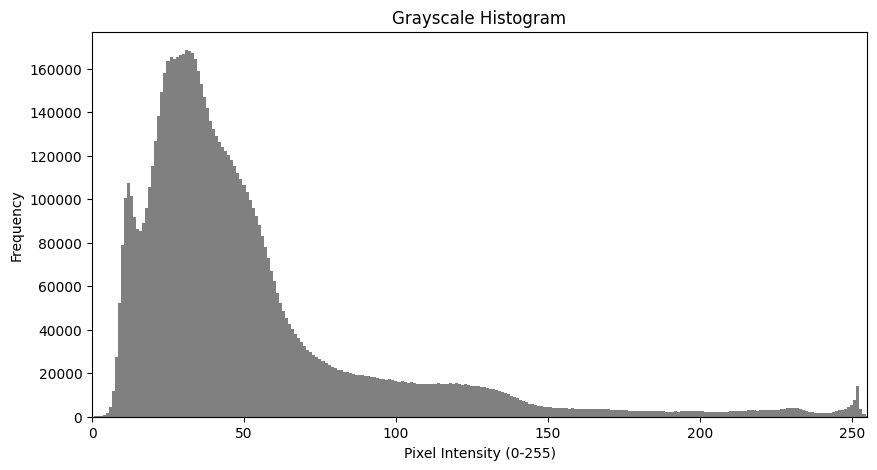

In [ ]:

def gray_histogram(gray_image):
    """return a numpy array containing pixel counts."""
    #initialising array 
    histo = np.zeros(256, dtype=int)

    for i in range (256):
        histo[i] = np.sum(gray_image ==i)
    return histo


#converting to grayscale
np_data = np.frombuffer(img_data , np.uint8)
img_bgr = cv2.imdecode(np_data , cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
#calculating final histogram
f_histo = gray_histogram(gray_image)
plt.figure(figsize=(10, 5))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.bar(range(256), f_histo, width=1 , color='gray')
plt.xlim([0, 255])
plt.show()

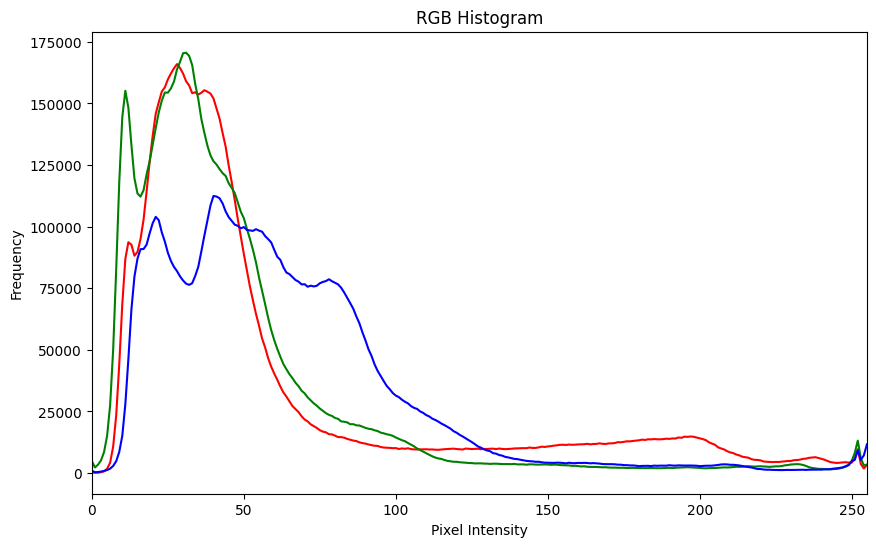

In [4]:
rgb_image= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
def rgb_histogram(image):
    ch_r , ch_g, ch_b= cv2.split(image)
    histo_r = gray_histogram(ch_r)
    histo_g = gray_histogram(ch_g)
    histo_b = gray_histogram(ch_b)
    plt.figure(figsize=(10, 6))
    plt.title("RGB Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Plotting lines with corresponding colors
    plt.plot(histo_r, color='red', label='Red Channel')
    plt.plot(histo_g, color='green', label='Green Channel')
    plt.plot(histo_b, color='blue', label='Blue Channel')

    plt.xlim([0, 255])
    plt.show()

rgb_histogram(rgb_image)

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

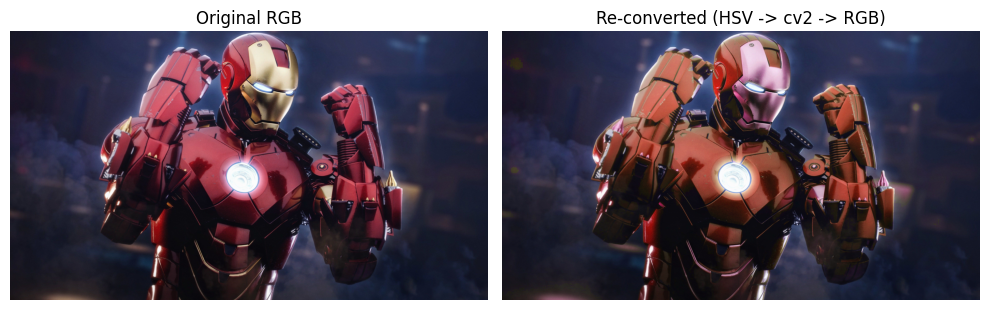

In [21]:
def rgb_to_hsv(image1):
    
    img_float = image1.astype(np.float32)/255.0
    #separating channels
    r = img_float[:,:, 0]
    g = img_float[:,:, 1]
    b = img_float[:,:, 2]

    #calculating max and min intensity value among channels
    cmax = np.max(img_float, axis=2)
    cmin = np.min(img_float, axis=2)
    delta = cmax - cmin

    #Value(V)
    v = cmax

    #Saturation (S)
    s = np.zeros_like(cmax)
    # Mask to avoid division by zero where cmax is 0 (black pixels)
    non_zero_cmax = cmax != 0
    s[non_zero_cmax] = delta[non_zero_cmax] / cmax[non_zero_cmax]
    
    #Hue (H)
    h = np.zeros_like(cmax)
    # Mask to avoid division by zero where delta is 0 (grayscale pixels)
    non_zero_delta = delta != 0
    
    # Identifying which channel is the max for each pixel
    # and combining 'is_channel_max' with 'non_zero_delta' to skip grayscale pixels
    is_r_max = (r == cmax) & non_zero_delta
    is_g_max = (g == cmax) & non_zero_delta
    is_b_max = (b == cmax) & non_zero_delta

    #red is max
    h[is_r_max]= (b[is_r_max]-g[is_r_max])/delta[is_r_max]%6
    #green is max
    h[is_g_max]= (b[is_g_max]-r[is_g_max])/delta[is_g_max ]+2
    #bluue is max
    h[is_b_max]= (r[is_b_max]-g[is_b_max])/delta[is_b_max] +4

    #converting to degrees
    h= h*60.0
    # scaling to open cv numbers
    h = h/2.0
    s= s*255.0
    v= v*255.0

    #merging channels
    #we round to nearest integer to maximize accuracy
    hsv_img = np.dstack((h,s,v))
    hsv_img = np.round(hsv_img).astype(np.uint8)

    return hsv_img

my_hsv = rgb_to_hsv(rgb_image)

#Convert HSV -> RGB 
# If your HSV values are correct, this should perfectly recreate the original image
reconverted_rgb = cv2.cvtColor(my_hsv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original RGB")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Re-converted (HSV -> cv2 -> RGB)")
plt.imshow(reconverted_rgb)
plt.axis('off')
plt.tight_layout()
plt.show()



## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

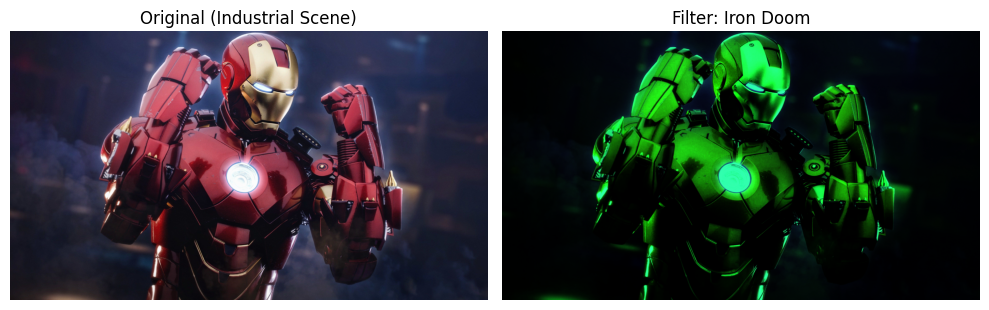

In [ ]:
#Truncate values to 0-255
def clip_img(img):
    return np.clip(img, 0, 255).astype(np.uint8)

def iron_doom(image):
    """
    Applying green look.
    """
    # Convert to float for math (0.0 - 1.0)
    img_float = image.astype(np.float32) / 255.0

    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Extracting the Hue channel (Channel 0)
    h, s, v = cv2.split(hsv)
    # Rotating Hue
    #to change red to greenish 
    # We cast to int16 to avoid overflow before modulo, then cast back
    # OpenCV Hue is 0-179. 
    rotation_amount = 30 
    h_new = (h.astype(np.int16) + rotation_amount) % 180
    h = h_new.astype(np.uint8)
    # Merging back and convert to RGB
    hsv_rotated = cv2.merge((h, s, v))
    img_rotated = cv2.cvtColor(hsv_rotated, cv2.COLOR_HSV2RGB)
    
    
    # CONVERTING TO FLOAT FOR REST OF EFFECTS
    img_float = img_rotated.astype(np.float32) / 255.0
    
    
    # darkens shadows/midtones, trying used gamma for old crt monitors
    gamma = 2.2
    img_float = np.power(img_float, gamma)
    
    # CHANNEL MIXING (dr.dooms power)
    # Boosting Green, suppressing Red and Blue
    # [Red, Green, Blue]
    img_float[:, :, 0] *= 0.2  # Suppress Red
    img_float[:, :, 1] *= 1.6  # Boost Green significantly  
    img_float[:, :, 2] *= 0.7  # Suppress Blue
    
    # Scale back to 0-255
    return clip_img(img_float * 255.0)



#  Applying Filter
res_img = iron_doom(rgb_image)

#EXPLANATION OF MODIFICATION
#i thought of mixing dr.doom green to ironman , i majorly wanted to change the suits red to green 
# so i rotated hue angle to near green , also i wanted to make image little darker , so after trying i found changing gamma to be good option
#now after this to express green more , i suprresed the color tone of red and blue and enhanced green .
#this filter can also be used in showing night videography and photgraphy.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original (Industrial Scene)")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filter: Iron Doom")
plt.imshow(res_img)
plt.axis('off')
plt.tight_layout()
plt.show()

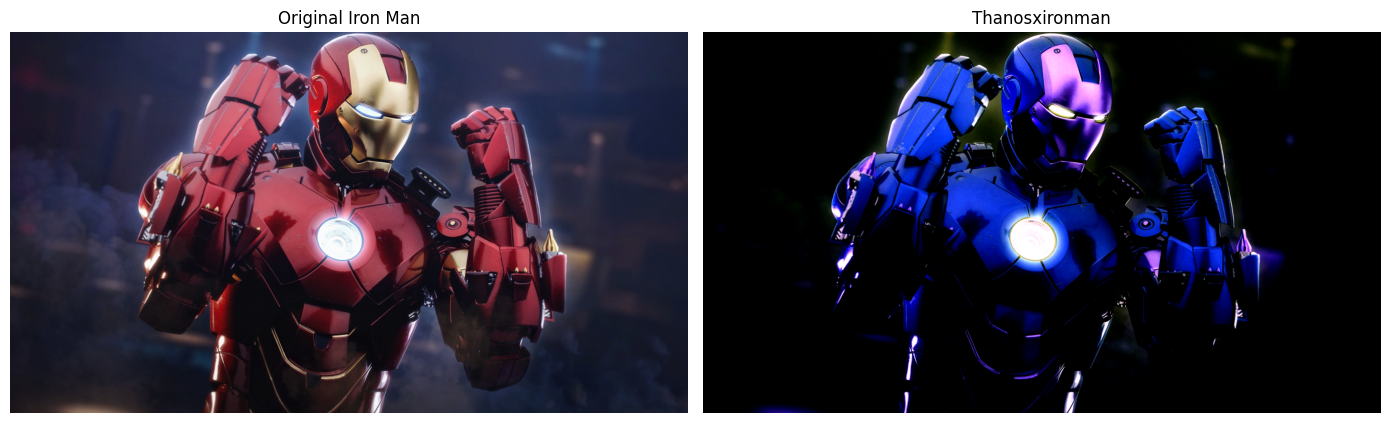

In [ ]:


def Thanosxironman(image):
   
    
    img_uint8 = image.astype(np.uint8)
    #  HUE ROTATION (Red -> Blue)
    # Convert to HSV
    hsv = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    
    # Iron Man is Red (Hue ~0-10 or 170-180). 
    # adding 110 to shift Red (0) toward Blue (110-120).
    shift_amount = 110
    # Use int16 to prevent overflow before modulo
    h_new = (h.astype(np.int16) + shift_amount) % 180
    h = h_new.astype(np.uint8)
    # Merging back
    img_rotated = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2RGB)
    
    
    # (Shadows & Highlights)
    # i searched for how can i change image filter more and found this
    img_float = img_rotated.astype(np.float32)
    # Creating a luminance mask (grayscale) to separate shadows/highlights
    # We normalize it to 0.0 - 1.0
    gray = cv2.cvtColor(img_rotated, cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.0
    # Highlights Mask (The bright parts like the Arc Reactor)
    highlights = gray
    # Shadows Mask (The dark parts)
    shadows = 1.0 - gray
    # Applying Colors:
    # Highlights -> Add (Green + Blue)
    # Shadows    -> Add Blue
    bg_intensity = 40
    blue_intensity = 30
    
    # Add to red Channel (Highligts only)
    img_float[:, :, 0]+= highlights *bg_intensity
    # Add to Blue Channel (Highlights + Shadows for deep cold look)
    img_float[:, :, 2]+= (highlights* bg_intensity) + (shadows* blue_intensity)
    
    # Clip to keep valid range
    img_float = np.clip(img_float, 0, 255)

    # Darkening the image significantly to make the glowing parts pop.
    gamma = 2
    
    # Normalize to 0-1, apply power, scale back
    img_float /= 255.0
    img_float = np.power(img_float, gamma)
    img_float *= 255.0
    
   
    # CONTRAST ADJUSTMENT (Metallic Shine)
    # Increase contrast to make the armor look shiny.
    contrast_factor = 1.3
    img_float = (img_float - 128) * contrast_factor + 128
    
    return np.clip(img_float, 0, 255).astype(np.uint8)



result_s = Thanosxironman(rgb_image)

   
plt.figure(figsize=(14, 7))
# just for i tried something and it looked exactly like thanos with purple face and blue vest, then made the atmosphere
# little dark which i thought will suit thanos dark character. so i increased gamma for darkness and shadows, i also tried to changed contrast a bit
# for active look of colour ,which i thought shuited the image , it made the suit more shiny. 
plt.subplot(1, 2, 1)
plt.title("Original Iron Man")
plt.imshow(rgb_image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Thanosxironman")
plt.imshow(result_s)
plt.axis('off')

plt.tight_layout()
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

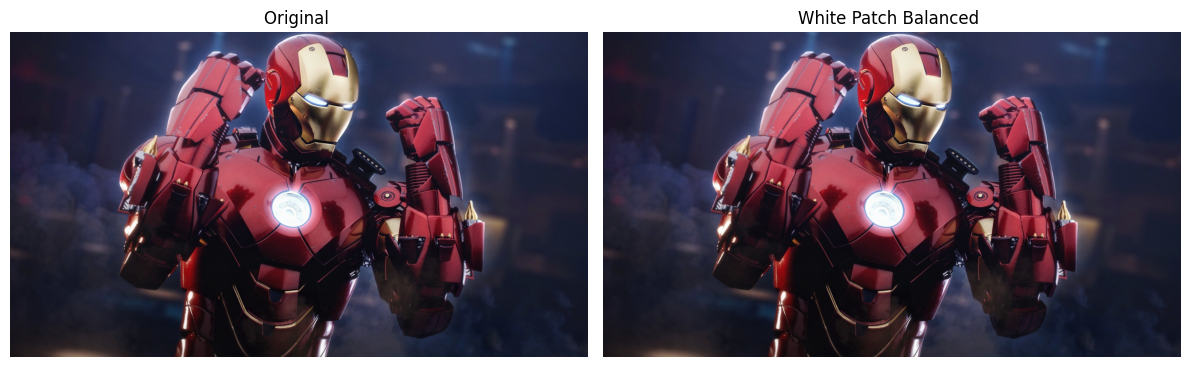

In [15]:
def white_patch_balance(img_rgb):
    
    #Applies White Patch (Max-RGB) color balancing.
    #Scales each channel so the maximum value becomes 255.
    img_float = img_rgb.astype(np.float32)
    
    # Find the brightest pixel value for each channel (R, G, B) independently
    # np.max with axis=(0, 1) finds the max across height and width
    max_vals = np.max(img_float, axis=(0, 1))
    
    # Calculating the scaling factor for each channel
    # Factor = Target (255) / Current Max (i searched for this logic)
    scaling_factors = 255.0/ (max_vals)
    # Applying the scaling factors to the entire image
    balanced_img = img_float*scaling_factors
    
    # Cliping values to 0-255 range and convert back to uint8
    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)
    
    return balanced_img

img_balanced = white_patch_balance(rgb_image)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original ")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("White Patch Balanced ")
plt.imshow(img_balanced)
plt.axis('off')
plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

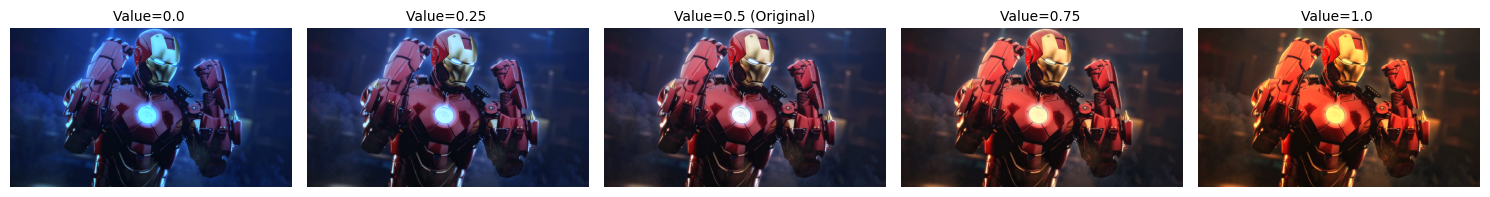

In [ ]:
def white_balance(img_rgb, value):
   
    
    img_float = img_rgb.astype(np.float32)
    
   
    # to make 0.5 neutral, i created a new variable which shifts neutral to 0.
    # Range becomes -0.5 to +0.5 
    ne_value = value - 0.5
    # let the gains in both channel pixels be 1
    r_gain = 1.0
    b_gain = 1.0
    
    
    #by this simple formula , whenever the value is >0.5, ne_value becomes >0, so it increases red pixels intensity and decreases blue pixel intensity
    # and vice versa for the values <0.5 , as ne_value becomes <0.
    r_gain = 1.0 + ne_value
    b_gain = 1.0 - ne_value
        
    #initially i tried only to increase a particular channels pixel by the factor , which also had descent results
    #then i thought of reducing the complementary channels pixel by same factor , which resulted in more better result so i kept this one.
    # Applying gains to specific channels
    img_float[:, :, 0] *= r_gain # Red
    img_float[:, :, 2] *= b_gain # Blue
    
   
    
    return np.clip(img_float, 0, 255).astype(np.uint8)

#trying different values 
c_version_2 = white_balance(rgb_image, 0.0)   
c_version_1 = white_balance(rgb_image, 0.25)  
original     = white_balance(rgb_image, 0.5)   
h_version_1 = white_balance(rgb_image, 0.75)  
h_version_2  = white_balance(rgb_image, 1.0)   

plt.figure(figsize=(15, 6))
titles = ["Value=0.0 ", "Value=0.25 ", "Value=0.5 (Original)", "Value=0.75 ", "Value=1.0 "]
images = [c_version_2, c_version_1, original,h_version_1 ,h_version_2]
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title(titles[i], fontsize=10)
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()